## Advertising Image Analysis - LLM Image Analysis with Vertexai

**This is a demonstration on how to use the gemini LLM in a practical business case. This model that I has a quick and minor promt design done to it. The case for this is an Advertising company, it allows its employees to take take in a new client have the client send in a picture of each product. Then the Model will take each product picture and with having to do anything the model with give a short descriptive text, and catchy phrase, and poetic description of each product. This will be done in seconds, allowing for more time to focus on fine tuning.**  

**I have also already prepard a safeguards in place like harrasment, dangerous content, and etc.**

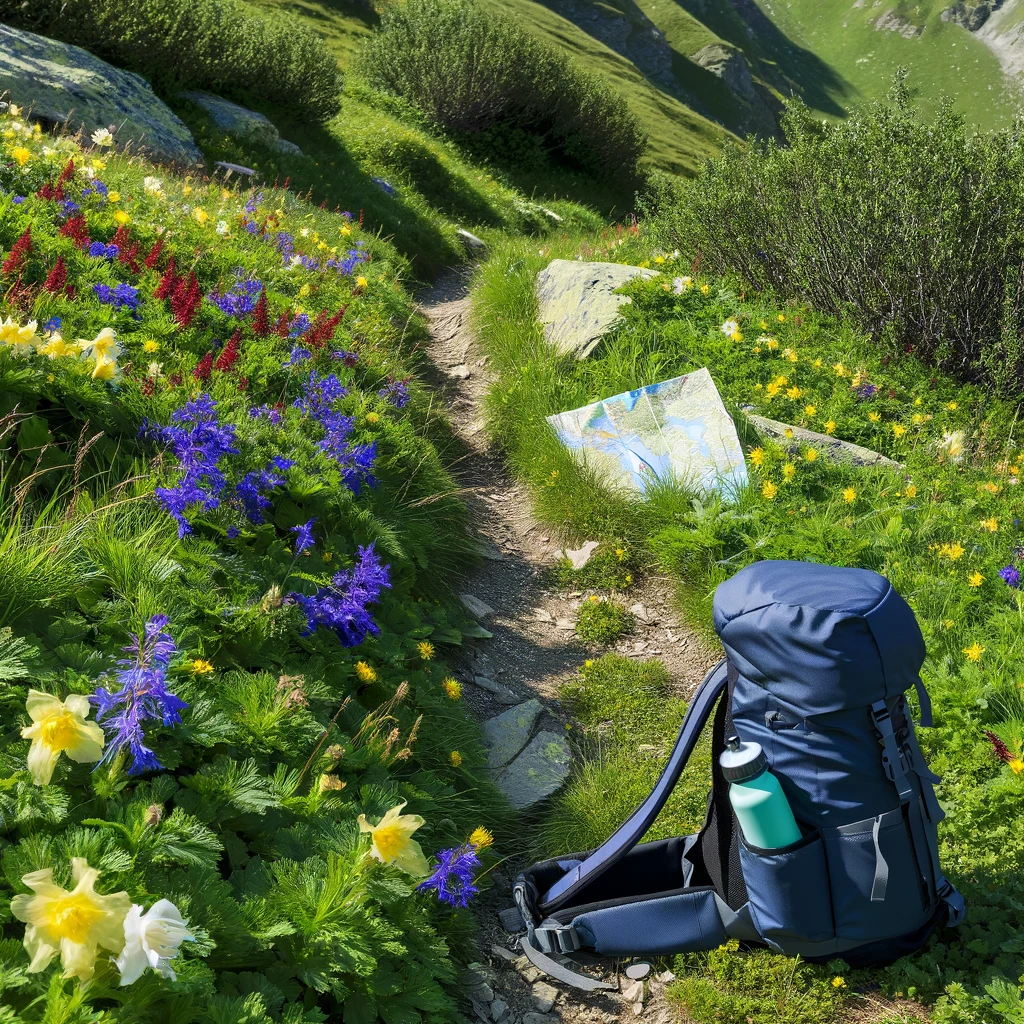

In [4]:
import base64
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part
import vertexai.preview.generative_models as generative_models

def generate():
  vertexai.init(project="[I REMOVED MY GOOGLE CLOD INFORMATION BUT ANYONE CAN INPUT THEIR OWN]", location="[I REMOVED MY GOOGLE CLOD INFORMATION BUT ANYONE CAN INPUT THEIR OWN]")
  model = GenerativeModel("gemini-1.0-pro-vision-001")
  responses = model.generate_content(
    [image1, """For the image generate these 3 things(10 words max each) about the, product(not named) in the image:

- Short, Descriptive test inspired by the image- Catchy phrase suitable for advertisements- A poetic description for a nature-focused campaign"""],
    generation_config={
        "max_output_tokens": 2048,
        "temperature": 1,
        "top_p": 1,
        "top_k": 32
    },
    safety_settings={
          generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
          generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
          generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
          generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    },
    stream=True,
  )
  
  for response in responses:
    print(response.text, end="")

image1 = Part.from_data(data=base64.b64decode("""iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAAAAXNSR0IArs4c6QAAAFBlWElmTU0AKgAAAAgAAgESAAMAAAABAAEAAIdpAAQAAAABAAAAJgAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAEAKADAAQAAAABAAAEAAAAAADBAMQDAAABWWlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgoZXuEHAABAAElEQVR4AWzdV5OjV5ondiDhEj6R3lZWZTmy6F3T9PR0T9uZ2ZWd2LvVN9CF9AUUIX0I6VJ3GuliN0KakNlQaHp7tNvLXg3JbpJFFstXeu+QmUAiYfR7XhRbq4lFJZNI4MV5z3ns/zHnID13c7J71c3nc+n0yOnpabfXrdVq+Vy+3Tq/vLzsdbuFQiGTSsfzfj+byeXzo2dnrc5lN5fLloulTCZzft6cmW2MVjL9dNcb/X5/kBo5PjlJpUYmJ6YuL6+apxejuXypXBodHe1eXV20Wledzkh6pN/rTUxM5PP5rZ3tkUxmZCSbSqVc4Hcun3XfYqVYrVba7Yuz82b3sp1OZy7bAzOZmm5Mz9QKpaupqUYmlWk2z9vtTrlYPzw8PTw4PTu7MP9sId/ttecWau+9//bCwvyDb5/8zf/8f2Uzo+aTy2Yb4+PpdLrlcXGRzeUKhVwhN3jtjZuvvX47PZJ25dFB66zZmZyYnp2b3dh8cdrcfeONV++9dvdv//bXjx7u3b4z1+tdrW/sf/zDG3/xl794/PjxzvbBw2/XpqZmzi/Ojg4PV1ZevThvv3i+dn7R/LOf/ui77741+fPzlrvnczGHUrGSGoyk0t3FG5Mm0TzpNs9Obt6e+5M/+eDT3/12cnKyWqudN9vPn291O+m11Z1Cvlip1nO5dCrb6vZP84XUf/Ff/ue/+c2v9/YOLP/5s7Vivvrqq6/cvLX09f2/f/3NW9Vq/Zuvnz99vNntj4w1auVy7vj4uFxurK9tn56cnZ625ubG33773e2tw34vtbG5NjVdn5yu3Lgxv3xjfm9vp9frfPrpp61W/6/+03+Sy2XWN5/20hdX3c7B3um9V9/8+utv8egf/aM//+f//G8uz9KH++3d7bP5+cV2+6xYHtx6ZXJuvlYfq+7u7H9z/1nz5KpanhqfHLv3+rXx8fLjx087ncvX37hn2r/+23/d745kC5lSudjuXGXz+VKpkh70SqPZWrUwOVlqNk/rjclarbK1/TSXH5lo1Hu93kh69PSk0+sU6vV6Jte/7DTPmvtXV5eTk9P7e8fZ1Gg6VXr44Nnm5t5lu9frksZeozGB4FdXvaurq36/2+1dZnODQepyampiNF90zeVlK18YIQbpkV4q1R8MBvlMkUCSSmxKD7KUwvVId9XJ9nvpwaCXz2dz2UG1WsTEQWZw1RvsHx4M+sQqc3FxmcvlqpUaqTZWp9OhCycnJyMjblEYyZD9XnakVxjNDfqZq87gqtM/Pbkw+fOWuyNFunOV7qdGmucX6ZFUJjfSueqMDgrdTs9kUKDb7aO/Mfs9V2XM1l1ok4u9R0/pUr446nUX+W3hnlC0WH48ffmwQA8XmGEuk/7+5dToaDlGS6etIpPJX1yEKfCu64djxvO0t0bQqlhCqHQq7aapy06rkB+p1UcnJkfTmatev3t2djQ+0ciNZLbWt9LpbK1cLJZySD2SSY9VK4eHx1dXFG6kWi6ct05Jb6/Xnpyol0ql46PTwSA9OpofLY4e7O+i1crNG71+6+R014IWlhfMYW//sHXZyxdqn//+m24vy9qM5FN4dnrSTibcX7l5e/X5LnWrjxVnZ6cR/7vvHn31h+8+/vjjjz5+fzDo/v1nn62urt67d29/f58W37x5c2n5micvXqxeXXVQ4K233r5z5zZFmmrUZ6Ym2u22+7avOl99+VUmm1m+dm1ze3tx8Vq93vg3v/3dwrVl5F1f31y6NtdqnaRHBvfuvd7rDQ72jxhMqmpWFHN6evrgYO/ignavLi5c71ymKuWaW9Tqpdt3lkeyvVIpc3R8OJLOME3dy05IYSbT7XYRJJfNGYQIVcoVlMdT87k4bx0dHWMNA3t12To82md8iGKtNpbLMblkNd8dXHV7vVKxGGNeBTdrdRrRzWezBux1e8b0Ea+z8CMjqVKFaIxctq9Qz51PTo7ZWNp60eycNb2YTaeK29tn+wdn/VS2Y2r9NMvftX6zzWVIpjsO+t2cYa+6qVSW8HiToFIn9wrrl0pxOn6TaKT2sITeIH7TFLLnFe8OH/5EAc9DYkOP47lbJZLvzl7qZtKDZJi08bP5jPHImX98itfRkLhm0r0cheqEl6HAI+k0siSzNlP/UriGyDTuwoK5w16WiqW5tIE1+EmmTuANNmIhVG0kXJ5Hn1aOhIahQr/rnVKpaLSYRqrPds3NN6pVK2qZQ693OVrIZLPp0XIxX8hgkKlyi8PFMkfpVDeZSYGftRivdzrddqt91b0MG5JYknQ2Q/PpTy6bZ0mOj5tu6l2jnZ2dH3KHp2dHx6eHR52D/W7rgvKWXIZq/d7gpQlhZoIL8YjF/8MH8qTdyy16nY7BM7kCj08nMaDXHXR7nf6gw/b2roKDxM8A3a51BHlj0OSBZX8cuJcKxg35bqrIR494tXb7KjXIpnrpFPvVDQFI94NMJOKPnzWNl8+9nx3NkImcz/eRl29y5UimW6/llpanwp1NVQv5VCfgxnksLpsHbxiWxcXFg/39w6Mjs93Y2JibX0TS2bmZ0WJ2dfVJ56qVSl+R/EqxgqWTk+OmwyFmsxk8pT50gbXMF6wI6foJ/1M4T9Fc02yehTykBmSVbFhdu2ViYYdRgvSEpU4exInYoajlDy94ubQQaCqQit+8CQ6kMrRkhOtP7hiXpV0UlPFB7i2bSYBTr2s0d/c+gWTP+Sz26uzsLMeQZNngeAuEQzKfxTsgiSQYoH+Vzo0Ux6rTjdpssVhnVA3V6bQvWkfnnYPz1gGCuD78Zzc8SNaE+oPiaKXfY4564NaNlaVBqv3lV1+QDZ6aC+j2WiaSzRZHUgXUOGud9UcIHcEIM8AXdPvp1sUleuINI3PWBNsq7RZlNTvz79975bYJb2/vDChDL9H9DIyQDdEjIdBgNyhA3Ui7udIUUGd0tMjC9CxpJAXpmSjKZ0LRGShMGTFCidfP51rnTcawODrqd+ui5S0zaZ+HbewnJqQFp1Uq3UHq5Pi4iyaZHADJXKdThebp5eHx2flZIDpGstfpmcf0dH1mtlIfG4BneMeQEhUYk4Fl86vlylWnl8+Ujw5PgR/ScHjcPLvojBbLaHjR7hwdntBxumy2kMmtO9eYOnjMK3t7rd99+oeNjZNeP9vqQLAU0LoG9dpIvZ5vjBVWri/Vq2USMz0xfefOHVThHXjvZrN5dLTfubrsdGnCeat1RlOsj+9Dm/6gl5lbmob+Dw4OWArsbYyNTU9NE+WLszMkq1arMzMz5+dnhJWTJ0hEkmtkNAepfq1SubFilulqrTRId2/fvnnr1i1KwtW5pADDF8vEN5QhZLaPtzyz3wwEuhPWwFD9QfP8jI1JDSg8TxJGvFarvv/++43G2MOHD8/OmkzK1OS4a9g4xvWidVYYzczNT7E1rfN287SF3DQhxPPKyEUo4+DoUIhx0bp49uwZb3LWbO/tHuRzpQQnpQsARS57dHTkE9lsDiEuWy0wdHdv5+uvvzk8aCZBDpG/QkERiLFpELd9cnJ62rycnW20L8/efufOvXt3NjY3DvYPnzx5StXHGg2LOmueuyOvzHPOzc3gE5Xwe2lx0Yp2diCY9OzMAmZPT0/94KP3Olftrc3txnjtP/yPfvUv/s//vdm8cI/t7a3Z2fnP/v73Z2ftbKZgaZhyedXKj6YLxczc3PTEVOOLzz//y7/8i62tnbPz8w/ee3dufpr6N88B/eLFxcXTx2vpVG5h4RoC5vMZrDlrRuRmqKmpcVbk0aMnR0cnpyfNwmiej7vqtkvl0SePn+zsbjOOs7OLqy+22q2rQUpwctw8Px2uq14ff/jdk5Pj07feenNjY3Nx7jp8SKALoxxPZmXl2lX3/OzsVLTz3XcPz88url1bxg/x0p271zc2VsNW5rNinlqt/snHP0aik+bJr375q1dfuzc9OzM+3ri2uHBx0SyX8wd7W9T45LS5vr4+WizcuLHSv0oJXdZWtzGo3eo9e/acEL527xUu8smTZ2xZYrau5uZmry9fr1QqzdPmxOQYXer1wz0wuZRfOMFtFEv5ick6DMRYsoXdbgd5K5UyX8WrUN2w3e3LczCtTYc7EMBp82hne9ef2Ww+pOKyhezNs3P4YGxsggS22lQrUy7XWUZcSwItsatwt8+6+SBLAZnBR4SkVi2TQNpB4AuFEp8tShkfH+8NhDSXrcsLiJ5nDGeYChTFkKXCfqVYBwvhH+liErFQlzSYzyzFM9Y9cUrULYkw4yX+ILkmXA6+M3DfP8LFJl4WIX0i/IkfZHSBj3Bco4VRMUUALjpvcgnWGQKeGCRuKsDomEHnqjsyMhDmI+8gfQXSIC0u0FyGuHfVm56Z9m6+kONupyYngPuYW4+XneKVWhdnM9NTQv3mefPp46eIjDJuy5RWa1XcYRwYoumpBrtGbVvtdqFUOjk9H5+a+fLL+4MBXHs1tzDLKJP52dmFickG79q9klPoXbu2ABeJGHnoamXMxPuD7t7+PiKZ/ObmpmVatRkadn19DTsWFxfZbsEq0BA607kc4U1SKYaFN5VT2NzYYNl++vNfIg5R2d7auSUxMD975/YtYibCrI+NVcpV9KTyR4fHjx8/cX3n8mr/YJ+c00rGNp8vrK9tHh0f5XOZmdmpbC5VLObFUWfNM1pz2W4jcDi5Xg9aKo6WMClMcTizYMoVC3V1VS5V+C6Y1XPGnBsjw6zgaKEY1/d67MlVt88bMZg4iJIj2bSLSY1bXLYD419eim2ID/+K097qu8CfZDXsqVxPdqRcLo3VG/7KRvQXXMjAAgHCUYhj7Hd6QaWQIqh3KIxEJGSTB84l0Sjz7jYBcb5/kP9CIpb8SzYZXMhj+BEL//6amFkibKQX7jWpl3IeAa7xAQoODU5KXvdnBgIKtbDcvtfcOhFdxOuaJ2GwFtKHv96EiDgnAMnI0AaKuS8M1usLXkLu0SzB9QzFZcCP7tUAB6zy+/kl6N8fFIojcsd0ooU8ss8yPQkxxUxi/vRgtJgvlwr50VwhP1Q10ij2YoGv3CtWCjllAKXgu98nTdiVRb1gGShCuVxmn60XdizAO/FchDByAcSAzf0B2Odi7EaSSm2sXKnkAuqNAOrmHLcMSET70McMg0qx3iBk/PrjA/JAySHsDvdM6uIy6AjijA/FygKwwwbBApoS13g1SR/ER03IvTJ4EY+Eqi9DjiBWQuQhkyPoizshmJGhvbRoMnmEtBMMg4RMvHwgQo3HceuLi7NQzx7BNg1rPyfejIzwCQNNU36TJCOkAegF5rHbZshdjY2NnV2cE2/MPTk5RC4zpjYrN1d8lIYmqRMzy8BwCWZwx6ABTTR5wZd5IZcZchqh8wkJBcCADRziLlgacWZE10ncGzSIB9vq4rhfQqLhi/F6UCW5KLjjoviTRHnNb6TxYpA+3gxKDjUkXotXgrlBJL8Cp3VJgjkM1WnIx2REn4xQvdshqES+2O+mG5Xp8fpMPlekuLHGsBtsBlDTvLg4dR8ALUK1eEQcJvjFpVxmdKwx+cknPyST3377LeVduX5zZnZGNhM7Ys4hXfQrsKYRSAeJYz8Nkoh8hOLlYlmyrFKqddr95uk5TvIX4dqk1qgflB/aj3sUPGxHQrJIhOXy4avbwC2ECZUXcuVSWWzGXromxCWbHQpnQjo6ykNJesVA1mdmbuThDa8jZp5ZIMMpzyMu9Qq8ysXjfoCCfLHTIWM5OWq4n5EwTeRAG5HB3Oz0xESlWDY+genXavxUpDB8ll6EiRMhta/Omxfyd8zD3sGRvFy5WjXOaKn8zjtvQc+Nscbbb7/95puvmc5Yo7qzu4ULM9Mzc3PLqy+2d3YPRTpMHSyBEPOzUyjkttXK6NzcZGm0MN4Yn5+fZxFMyrra7WGK+5z3gnFCJksFmAXgLI5aThbdMoOsLN05Wbm6HORyYUD39vag3GKhMDc3Z+pMT4KQ2EHMFOnm0TTg1CBVr5Xu3r25tb2WHun+/Gc/eeWVu+JmAVn74rJ1If0TLmCiMV6tVOFRIzMV8qDElP0ViZLsy4BTCIoxIVsJG9KmhWH1Wu2ye3l0eCQNTLnmZ+cxwJL4OcybmBir16vClk5rMDOzgCgiRWyD6UhJKF4vokzidXzUPDk+l2E9P+tYgiSGFzuX8dytmeHLzhU9JDpe9zHpW3hJZMjscM/uIsDmaU+bJ3fv3vWpfh9Zz997//Vbt5ePee58YX5+YWdnp1otv/3O25VKrdls7e8fkW8xNLmfnZsCiTLZPkSyvb19cdYql+qmen7Wlldb33omCXXaPOh0zo+OdqanJwBBIOjO3dtYtL8vbZyT+GFVRSCVaqGf6gD6d+/e2d3Z/vbB/cdPHrcvOqDku+/dg2Fw9+DwgAmziqOjJgpns6O1at1nxRUMzt7uISKPNyYNm2TQIjEgWsNT2gSmrK+v3b37arlU/Ze//m23U7hsd9OZDv4q4BwcnHSvRg4PzlZu3CLE167dAHraF22UEWJK5N29e2v5+uLMzJQ47emTF+b/6r1bd1+5ydFSzOmZOm+xtwd1DWZnZ1zw7On68dHZ7t4+N8wk0UshVqVUPDjcVZGamh6r10SYN+hh8+RifXX3cI9N7p0ciYjKx0fC2atXXrmD3Rvrm+Qkny9bRa93kcsPyhW1qbTU2szsxMzcRL1eqlTzlRpUpNwjmXHJh0JaXCHnIOwB/cvlSlilSKiZuIJVJZ/kBlgMrwGypcpoVuiiEsWQjWTOL9rdXvro6Oziwm0zqlDbW3u7eyeyjc3Tzs7O0fkFpCAa7OztHx+dwHO1am2sMFomehACxz5Ku0plUlooyvNlAhZU8hMTtUajUsinwX3ZNI4jlx5USvmZmfFKiVL32JcME+NJLlUYFUIMgDEuJqxqeFvWR3o+k2D+DNuUeIYUUBhIJAoGcdHwMfRCiRP53rOEE+Fz/At3jZxYE2L8MnLgboY/3owbMaAJOg23BBX5DDCMvD5HoakwUJXLZ6qVMphSLqt+pA8O95jm09NjEKTT7ezu7SKFDB3rwe/Ozs8Lum6t3N47OCiym6N5MbzUhepKZB8ygF36wcPvCBKHsLd31L7sdjr9dmewvbl7feWW2SoAysELSh8+fECPxLG78ietJvAkzf/wu0cCAMlR81lb24CM0ZQYMwV1RatKbfn6DRQTG09OTPIDF2cXgAJwDPIigjwKvAxRIWZ9bHxsfPz+199yVnwQuG+Bkr6Hx7vKnM2z04X5RUNxFaurq9lcXkYAlaQWWBB2TGJlbKwuqEYB1BcdTk+NW/Hh4S5jiD67uwdyePyzCgwwgQ3hDbuRar0QCZ0zF0dnApozSR1yIvUbOcgE6GJHAOLLy86xHEdSyuhc9dERIOAmIafR0QLXQrMKeeFoBAMXipXNs0RaWIiMV9oXfl2p1xSwMJOS7ikUYIlBrV6cGK/wdlMztXIpUyyOjNVL+YI0B88JroXP50QjXU4SA6EM8/3ISRqZZULIuYYMei8e8TSwFBk2MyLqNaY4ee/lL9dST5fFCGaZPDznO4bPvRU3CIgBggPuEGG4s8SzxIDJ3aGQHt2fnpmYmKy12s1yJbewODterxQjH8UayDVdMdYi85hGuCS6lYYYEuyjgKDKEO4pWUIoA27y9EanXEH3RHWQ1GRDVQKXeRkJ0twxwyFBxpwaBCgiz1yb9yO+6EWhxuVI7OM0SwxDf+H4i5YohfiBY3I0ZR7H4O4Y+Ia9u2gRY17bCF4lGtIT1gLNQPByHJVKVURoOgQI1oESgyPp+J0QMoLJYFnQNnkMM9ABmpK4JxE7y0vW4kLmcMgIednI1kaxB8nJUgRycUFc8/0j5hnsjtf9HpoWNPFCsCt5xUxi1ciRXCdw5ZHj72ABmnk5GfT7wX26XCmbnoDaHJKhY8CQ5AgbhneJXEk6i4T9KFIEW3NWLzQKZ5rJooYUbpJatjTVg8Dk7p+kN8P0gSHhTs6l84IlkCgoInFgRJlEIXYuC0ZB+bJL6p8Bp3gTlmHIF3GF0SJ+BGFlVbKZUAy3Sh7DJQ0DABIdbAlRoSFDLlgc+lt9IFETULOJD4eIecSTofaYsQV7Cb2DaDHTEFXDgJ5u7EZBRywgAbyKyEaC3ILBTyFJujjo56YaS7MTy/XyFHlMXuehrvrdS7Xh04uT3oARyJFQImlkd8PwLmDQz1y/dqfRmJaY++oP3woe7t19Iz2SR8fTE/gnuAB0+p8UKg7A30RFLCMOi+UnvI7yWC/dafeu2pEm03dicGYeFRKLdO52aBtLS8QjSBKEGsbGij8j4QAi5BMDK+6RI2OHyHlOpb1lzgllYzLeDqGKWsogUiWkLMGlyVzC8aGUOwYjFYbIjSmn+hKCuUzx4hzyZBjlClInJ3LiaS5jZnoB2Li2OJfP9yYna5lsr1YrsyGSTWJ2osJ+BiQWpvBSA/md6lhjoliqHB2digfGx6eq9bpSBo40xsfMWHZbluGVe7e2t9eWri2QfVlaOPD3n9/f2TnWHJPNQRLVicaY7ITE9Uc/eGflxuLslJ6RSr1aFQNE4JPLsBViY9Iup0aPhcQAD7yquhjmBfrvKb90cDwyQwiqTEeBSZuHTOTbb715/fp1GrK/ty8dRbCRkRyMFgoEwI+PVKsCICHd5a/+/Ocf/eAHROv49CRN1LP5w4NDhgkZT5unVAJF0B7LCSXFkMCI+cmGenUkYHqAb+icjIZwsza9/YMDhgkfSJ6srU8dHx1zaXhm9sIXsc721m69OvGf/Mf/hJB98cUfGA4ftRwFdEqnnJDNQFKB1VQARJAMHSNLT90CADSaOzNmwB+pcC9yoGLjGrHsyekxOSAuNJgHZOVFh67ncRuN2vXrS4dHh989eCgdQsukdRGFyH72938Q+ZCS8/NzsHJqapztrdQKk1NjZI1ptj5YXCUKz8G+YiU7PT1eq5Xq9cp//d/8V6KOr7580G4pMkxBh6P58vbWvjy6Uoyi/I2bS+++98bZ+cnm5tr1G0sHh9saKtBNPWNpcWZ+fubFizWKF2lrWb3L/s7OvpwPcpEa3TWNsenT0wv1T+uFvBEt4vAB1qQq1cgqHR4dXL9x7Sc//unq852HD16MN6ZJyXnrEM4+PDw5b7aWlm6M1ce14ezvHTx58mRqeub5s+c6DWZn5mCUmZlppRsJxc2tTUsQDNx77Y6gZW9/B7qVz93c2Nzdle6MbNbB/sn9L58c7CvL1ihYvTHGrzBZa6trJINyUmSlsoOD08PDJjg7N0fKF7c291utHjCtZqfkANwDKtBSSeI5nyMvPDrFp7lIMDkpMd87Oz8eLUrujidx0fnO7o4Zmo9gArSSigb+GHqSA6crXCiSyBKCoZWSBrSa5I6+MoIacL1S4VRII7EHT5kHFZJWu3t03NQWIsWjQLG/d7q/d3RyBO3lVFe9C0MUR8tJGYdwmqMeITiyl+7nBr3IoMrPCYkDv6RESpDoaGOs0miU52bHG/XKSJqW9pK+mtpYAK8qBMaX9fptJKUdgXGg6VxA/HDt+MpvytIlvsQFXqHUQ0QFF4bXSX68TtTjrcjtBwWGP4ZhRPkVmpK4UxeSlSS0cLP4MGgVQ5h3YjrE8BKo8qgGkbwcMEbAovHAZVUvHsP0uAFonlC3Ls4lLsHxiMP7g4mJcTrFABwcHajO1yoNFmxza4sZq1SrDM32zg67cfP27Yv2xd7BjlgU8Y9OT589X9UmKBA7Oj4fH5+WnrG4W7fuklvdNZ/88JPXX3/j889+v7x8QwDMZVLn8fHJ/YOjnZ09kGj52hIhgXpbF23y/8477yCOOtfa2iqMNTE5ubu9zR5C4QwROtUaUUBgEuuNBpBF35+/ePHbT383OzM/OzvLRBwdHSjXbG2twfRsBUS+sb5BPckJR87YUMzRUQhQp0R4GVGnOEFzGtLt7e7U6mV1dg08JyeRVmBVJP35LEzhw5DIi4YFAeFUVWmA0vz5DrrG6HnXyIG8EwTAuEE5sD4mHh0dttqXLG1wDiiRlwxbF748cGvAXAKeIyE+JWcJBsPPZIM6sH5aBglEAj0IG8spkPYB5rpXqeYEA3OUq5ItFrIkky0yuJxnCGEgfkLhV0hQ8p+1RADA0AViefnDfka+H6HUy60XQYZi6SN/fHgl8Idynk7QRD7dKPxFMrrfIKOLwzd5LbnzUIYtwUrjsrRuq2K9XpP6NbfGeF2Sy4pmpifYW050tDRKVkG6y67cTRe+I+a8snHh9aAdXlhUYM3hX+5vRjF6QI58LrBJIBREjUX5PVwjOB/Jz76gXXKBhzQkO0Z9Xs4fU6TJFGQD95ydMm4KOyovMAkmMhGh5RgqSIisdrhslfPop5VyiESPZJb0nlcMcG5OJMfH+VflNZTBEGEnvgZ5hnMOloQ+J5DeFfFH8OV7tvjokGeWA0hZO677J5xJsGB4RjDJzMExCzE/s0qWTLTYopePIeOGr3f7WBbS4BFgDXW8LRMTYYXbe56mF7HSHHkuCl+G8RUaD6mZjBNITUUMGiFO0EPwgBWLphr0YXZaxh0tFYSeFBN9kuhAPtit08wHUEXrWV2p56F4+KyR/baCUKurl/MnCuhVqdYooDkjiFhV68TS0s10BFkFVDWCuStrwxOohCDuaPIYKsVpWB8cSklC+HiKyugQRnQkUvVeCiNs6i/7f0Ld4AfvoiRLDLh7dygtLnKXiBUY5WRkb7gSoRAzuZfBhB5au7mVENRgZaId5jL8VLo/Uhodk1+am7k2O7U80h3lj1A/YSUwpi1QANA9uzg5b5+H2McHjRQhjRhJtmp8bHJqclZKu1zRmjuoVRvjE+Og1s7ORq8fcB9sNg3JQTkIy8M+VlcqxFLwIaY+iK46LeJHUttnjJg4ShUl5A/PIurowaXRrRvBoTyi9yB+mJBFZWqjtbUvVU2+ySfNYv/RPNZLtAJMuj6oRGipjz6CIEjk1nTaZHA/EZoeTTGyywwc/FLH6w+0JyXoXxkwJT7BcYmUpBcA0lNY7mswltM5OVYm6hY55Bz5VxzrubGsJUlonp6RSD6PnVYyApAsmGBXq2OyQnuHBzKAZ63W8UmTUl1bum7Om5trX9//AybMzmtjm9TmWanUK2VdOUulkrzVOYxMFIXkCub5bGq8oSRb1isFvtarlUKgACURVYIUgATr85ueKybIXfK/mtmSBFCktM7OTkhzJjsaMujeaARlhqCkU9KhxGZrc2t9fR1mZdToKlX0JJHbkIFKJS9Be3ZxpDn+F7/4eXm0Llu8tb37/NnqxtY2NkjvGYpg0xDXR3CWmDB8VQdXqYfqrBz5LtqXiG4Gocl9XQcyHKEw6i8gGkmp1WvkVT5POJ4ESz01Co+5uaW/+OV/8OGHH/+Pf/0/nZ1H6z9iA+6ujCKkxrlskUjJLzOgrKGVJsZHvp/am1gnovPEpLP7kYfua8DgU9Ul5IGzN24sy1WzJgCrK+ktTy+cUWf/0Y9+8m9/93mjMa3u9PjRc0UGHaqbG9F9K+ketcWzM/hRn8NPfvrJ1va6rLaQQKqGTSAGbk2mIZLmOdDQ09Lzqz//ZaFQ+c2//FffPdD/QOzTe/u7gx6vnG40xo+Od6v1fFUOuzKyuvpUofP4ZP8v//GfiUNI/9Mnz5Q7eSAzOT05n5+fe+ftDwRrBHphcW5srJZ4otzpUeeb+4/kLRjzRB9yjfHiDz584y/+8U9PTw5l4in2/Pzs5sbOv/ntH4qjtcmp2nsfvD45Kdbs6fYZn5h6/fW3xhtT+/vHai9gt+z49Ws352YXJFylFwk6eK22jlJss8h4d29tb28LbOJo5+cWDrVeHp6rIezvHQpnsyPVSmlShKKF5vryyvHhSSZd+PDDTxRJJicm93b2Hj0EsfZFYa++ehfN5YKjgpEele8HA2bnxutjmsTTV53z0L2IRTVKgRfpsMCp9HhjggLIjaFzaGZmRIVxb2+fJEsgsZDQ3NTklGqyJg0j69txayyin6dnrbX1LQlmi93c3D84PAKhPHgdwKlcLQrqKrXSeUtdJX0akfYFYK4YJdq0g0B6oNXuQflMNnEqKAcPpGQGz55t7e+rR3UPD9v7O2cnpwQ20IncXGTsoidWdHo1WkjTr9HRdK1esM1ASCC1oPSUy/EKudqYtFNLqlS7vNiOoIddlYAVrBDcJEVCrfiI6EXG6fABkR6jVnIDLghwpqTLbjLMUWqQFXTVywfj6ZVwM+FjEDKx/slHWMn4ePITGh1JFtS2uIC0AYyERmUZ5qiGi6WN3xiP6HqsXj06PmiensizQyHSysD99ZUbVBXEyhdGxUzapXRtqXJKl0zPzDL7/kIF1It8jhgsicka4w3G3Yaaiq0807NMmCBIKkucoAKm73l7+8Cib95akdpfW9taWVkhdipj5vrzn/3iwbePwNyZ6dn3P3j/+vUbMhFIR1sXFhalGLAvwDfU2u0en5xSPRkUDgeMYBmojeB6bWMN21gttQUrYhNQku/Z29/CSYL+7NlT+mIZ5UpVECvNf3B4SLkCHwx0SpSvbE/SdjxagEWM7IoXz59KkqlZLV1bNBnbEgp51dcms85uEj00l0ZBelifh2MqA0ZErbwA8R0fn0At5Bk/GVIYVyhuVn6oYfA92QGyubm1u7Pro4o60XI9GOExor4R8a2oKqqgWA8wM+Bo6OORm+mKosPw2tkFHGtcMSAp1c/Fn6qTCW8nGxwT5eAo+pUo9aSA4RCtyCtHCwd7azirSDQiwBYJ8Qjx8lIEnYGYQUxm3KJcn+D75KLkF6ZbUFwyBPrkLT7+7z6ilB8jm12UHdwMEiWZPB03ZzXROaCKLBLzg7y2Z9BrHYsh0oO+Gk61Xpid1YxXUxOXidASZB6pnioxrQDhITMTphtxa/eK2w3zkWGBI+gh86QHNjaHQJxxib1AQIzSNGN1Va6q1USTko5zK2ediJMH9yY3YVjso1syMpoJeUNRvtkaKsrvuvcDDhJQ4S6uAj1Z18V+A2GAooHdArq50lIJQk3vZ7BY4ap5dlQhEiP2PFwNYl8GnYmL+QhEw/REqdE4CJjQmK8M6xBgzUrxLbw/+lpjUCCCh0yag8aoZGkupjTxwM242IgBxUKMPInPeySwNUgSdxneKxkzxMBF0QrlHT8USpgB5AkykNPnkw/FL6NhbyQ39f9IYwqHfDRGMDdU1baqzMvJGcY2gCsdlQIwY7OwtAYmE4nxSK+99rogi1dyMa4Z1cwxGuV18bghzbV+C0pQELjiZfREashsPJuxJaA/OTWuRsq5M2smnAwyQHd6SmVQzpgxftAxQlxEimkNRddqY72EypXet3KGfiD/KOpDf2Pq3wiJMuOQN3IcxtkgyO3DIZKWbdOXPmPiF2IZhGJsqFLyB92PClXIjDBV/idE0v8LcrWlwti1+ZtX7ZS4WP5U87C+V0hRKMdjylwfSa5VS2qVxAYrGRnGEw+Vr8bHpsgAIRufmDRBXFZHXN9+dNU77Q2kG9Avch846Jn8vflkR0TU6ghBW+xAasJofRpG2ufiWPUHbXLF5GIpm5Aw1zDIZCURDwtMC7AsMfC0lSehlDejPi+aSNsqE21y0IKP8NeMJ2pDvUhFV/AFqemMknRCTJQLm4JienzwVyVeJGhTE3SKwExlsVCG8Tpt1f5zgias5rO0CehM2t05Oj4+j065lPBD85g0a6TnbUfUAAwO0QPLB+bkfcghd8Zfwwk0fWZ2Vi0AGWZn51hxKUKB0GX7XCuaNpDxiTpjqV2BjHUuBxsbB8ifHslJi6tJKKsszE43Tw/mZiY++vDd8bGqhCkJUuvDI/VtEdcwbGYcoFB5pAQVy2MK0WX8W4oM0SaniGOTBqIEJCqVkIHU0nnSvLdn89wlkE3Eq/aQ5ukPQ6qE2tW8MwUVNpSnY5fM+x+8S16fPd/44osvHzz47tnqi53tHXsaoEOGHJOZNlYGucca48gNJw5lKMRUO1K7FZsrMsletF5fA7fYZ2pKf3+HaSbow7SWcCpSHcEvoqCiIStS+uSTP/nJj//sf/tf/8X/8jd/w2d4C2VpAgFIyp2upHLCWTY8MluIkshM1I+wxwKT8ZJNUaYSVw60Fv30Zz85Pj5cWFx47d5rbOvj6JWPnNykGk+twlraKjA/d21zY5vkbGxsMSgEnfVWFpT7lzPg9aFwk+90BYCRsFc9FDax4MIklHn1lVfZFLl8mZ1ry/O3b9+Ru/nv/tv//smjF9ev3yYBh0c7NvYVR8c2N3cizdI514h4Y2Xh9Cz2kmrEX1qc9+fDhw+3tvafPN4FAqQhKDiqyrmK5Z48Wo3t1t2r9fUN+06mpxYePXqxtbWr/zgqD8XS8clhpWbHCY3MQMDkz5KxST89qGOqN2/P/uhPf2AT59bWBh4peNnW/PjxE3UPUOPuK7fffee933/x5fbm4fbW0eNHL+QLwYut7Q2ohouUhX/llZvswvr6lp4ioRF3YDnXl5cXF5fcTq/+RGNGGzcQpiMRkV995d5wg9H9+19r27j36muXnTC+WtaQWsEnKjnp0d2dA7B4fgF6r2uDOzzcU0/iO2Ho5ukhsuO1yYgS8dQ2AD9MgEIETqmRsWVcWLliG1kaBmNebe3wIqmzMyHwXzp1eExbmcKr3b3DprEubL/rkNVw0p0ryQbYjv9VR5KoZjHbjCgjwgyMZMV4AL24guZzaLA56lEra7k4vzo91Xfdv2wJPy5Pmsr3ejng3nO1AspHuqgoL2VjEf1kQGqVKAjoYrJJ1N5oscfoaMYOwmIxB9tBbUSar0lqEW2ykaCQ8DaMNWfA0sNhxkwcd+JCwnWH6/DiH3/7m6EkPB68xR8f/+BP5vePPz4dmmVDv813gUnCXnOdqjGYzqrIQMhoWgpSjzdqCaILw0SP8MX0wBp4As7GMcaLgB2d2MiYq9RqMZ1cpg7rZ6Tex05sZjo9LpZGp2enjk+OW5ctHUWWNFaf0O0sjlpf3Z6ZmWX9zWpqcl4xZ3NzwyDc+vbOtgYuaPv6jeVvvvn28ECbVpdlY3NAwM1NWiwgb3/33cPZufmf/fyn+hNXV1dt8KW6IlYUSPKdfay3V4rRoF+sts5sSZpf/vIX8rXPnj2RzZUAe/r0CYKwLBQPx5XaGmOMXsZ+FSGi+8IcvCkSkVJgen5hziQdG3BtaQnv+H32+vr1a0Dqs6erS9eWuGvMCiwYrSOZne1tNh2HSAjXS7QQkOmjrT4uchBFg5iWJt3FYEvl8GuiJ1iN0FIQQzEssP7W5o7lm0aCWvSqdngBlxEJMQlXgZhMN7tohhgawtzvUwrhEOZYoGvAU1PQJezEhUq1qJI5OSH7Ua3WtFACOlHUZfeIUwJ4AoQMJSwwUPA4RG4obJ6Gy89kdGMizdA4e8tniJmZQxCeJ/gyYokETgX0HH7cb3YMEZLxJQNe4kV/x8/wLZAwlZZ+UjMRssvC6J88PxcAnO0plirQj6J/Gb7iyxfmpmzUUQygg7KhhN2tY3zddIB8EoTEvZAied0thlNxTQCvgGXg4PD+8U68yFr17NNuZfOSUDn7pMH+y0ghx4pgGqi9ofZX5mUC8SAXHbHZnWfBPMySgMPNhOMRJxmdJLgXSKR/wvWIQITsLkvyxzrpxZwuETQqtcnRNizKziMvybhGgwMu+BcPw3DywSmM9rDeeCl5JMuN+ceDlES6hfpL54vxkgRzhDcJiv1+rORSHtvgyfITCYjQ6fvHkFl+uySQXvLPc/ShRMqDtJLf9zSBvy85PRwWMWHpcOsxyaDA8IEOCQAeCkB0QjOAYbMGqdCDfE7z3ML8wttvv8XU+xzrbXaEbYiNDGV811MUxQBSo44HKngRN8kstoim8Z9clMtV+ovJJ9GQqpkwNNFiQytFzspZFxq+/4jdQwhfEpY8K0oaMfmHbkNq+58OeFEKsQF77KUjWtblymBwECBWyb25cMgl43vd5EM7SAJKJD8Bc6O6q+hhRRgXIuKHKvMJYfh7Slsl+Tv+1BEjus+lDBSf2p0LoExHbqtzrvmnOlGXSZEsPz45YuiGuR46WciWVFCFXkqmujpbbZNt7u1vDEYuaFhitewR0kEKU0WdOTZZ6aRLm4+7Y0dElNFeExDZbmB6ZmXRo6GsGTSMdiNuU0sgjZggqj7CdpGJRA1p1iDRlLLZhkVk6QfsUtQtmT6gnLoyB7q9UY/KGB1N0Ip2CLgImBwzjqAcfhkTF7TGKHtctvWMeS4nUtPR5NZJ5/N5wvGajXwakh33YpsoSytPSsYkPlj9Rr3OtU1NTq+vr0cS6/KK2WY3PQE8GFicnZqeMz9cyOZLOq+N+fjp86P95uNHawcHPNvR4tL8/ML07q7kkp+jb+8/ffJo/Ysvvnn46OnewaGKkyrFjeWl5aX569cW7r26cvfWikQMeVAJwV4+ixDiKPtmvbwGQu3ubh8c7qO0SJzOkhKoDyqJx7WbCzSBlEQNKjJ5fZAXvyO7l3spPRHAChk6HY782vKcHzg4kbnUa2/c466+++7RZ5///ruHjzZ3tnkIJzkE/tb/5NgfXs7WtGw01aA+Zeb7SYZYEHfxhLiKav0aviMGRVDaz5wx+nQ80Q1GkyEO5QxzoSe7XHn1lddv3brz6W8//R/++q9Nm3JbLdXQtsH/aAU2ZmK7TYFHDPVAGsYKJ7Db9WHJItAHlS6lG0A1uEV9WIePHX6osb6xZoMgTroeUdUN0MlmULd78OAhcuvJuXX7+ubWGjkTxt28eUfl6Oj4ZNLxRx1Ju57e94XFGRMpFfXGxBZAGr20tDgxMbGxsSbI+fiTDwWUX9+//+lvPz8+ZKxJ/KgovHl2cPfuXSWFrc0DEY1yyK27Cz/60SdPn24U8jVb0d3u/jdffvXl/WdPDqKVNFNrt3hKZGzZIEHU/sX/8evRvLTr2WihMjk58+jhsxfPNxCvNzjHR5sxnAsENcIBq6ubOnwSYJHe2NyK5IJaarbrNJLtnbVnz55ItNTqVXbb3l8+ik86Pjp8663X19Y2d7dOtjaO1tcOtAaoWmNcfazQGC+rdkxONbSCwEK2vT17tsnRCv1sBX7lVbvFl5eWrgmWkJHptAF6d38rQr5WSy1CicPP8o0Fuy+UOKLH9UzysTk57oyC2vraLotshjwU1AWN4dRYfSwp4YpbcCqrkBfGtNdjlfTkCQAUDImBeg4Q2WhoLLnUvVCpFBkU6J9FmJ6evH1nZXFxns08ODi0O+fa8nV1aApsvUBJoaifxxKIdlo+FI7nmKQN6uOlTF6HZmD3q/6V5vUkMachmqAqBJeqAF8lDIFs2bDTjTFn1U0IblYrsGkErDo6ajWbgKOUFfOcoYth7pPjRDTXwFHifn010Yc9onpbqFacH5LTTUWbVCqEJeBBuLpU4oYTn0vPkxGy4C8jiCRJ7ul7L8ECJy2h4VxY5Jc44Hv/nPw/vCFB//f/wEThzmmQz9KscJBgQL8jDLB2WiNqciKH7nF+VhHUewzx8o3r3EZhtGTGNZtsatW9gz1yJVqgtg7e0k8PeXcEQb3+8enp0rWFsUaddeQydBBtbK0xSAKyMCmZ/PbOnsTMySkuXWroUqQqFsv3v7n/6quvwqyqtFtbWys3r7/73juHh1ijdyp9sK94pRFLjyIe9O0Gnp9fXFpYlnf/+v6Xn3/x/4C19157Vajss7v7e9JpdBBc1P3POsTG2fBXPYcfvFh7zrzDxJKvQCTbe/vO3VJROkUUU7P96aOPPmFnBPu65lBpXG5nzDuVr7/+A14lrXf6AyeYW6+q+wm2o3HRoWHiyDguTL/NaNhnrThNLcshNEMOmQzuwIVqbkJT5DV+4sayej19IDB7LiKxSjX614xBWSgyBdEJo4zMpgmcpR5QLARxxLaotFMoLN8SoTLRmltjpe4Gwq+qlC+WHPtzeWUjVOAQiQAdJooANjzLQgnryOdoybleWfpVr8scjYKZcCWrT4iQwm+wJwQmkHmIqQdB58PjpWjUlhEc7mENtz18hNlPTD8hFc1E4StQHcENdzD8CcWIhF+MOUS2ovHkBzQfXsPER6dTvJiOlLCMSfT1dlOdbir2bu0eQpyqLmPVUrp3OVbLT8+O2Yxkge3Li8TmmB0Ibi9vMu9kGZwLa2MNTGjkyMRs6eh3ddPh+2aUnFJB7U06LXEtyCxXA8AjuCqx0EvTMEZDDPhlFdaIJppF2aIbKzfFjZoEeC4NZSwYD+1ejEVUHqEn3tm2O8n4MII2GUebLpcE8AE6KI5cRY41DiZSGI7NUXKhfDoNpfuJ5YQLE+68XJbVhFb/f48gNZIHEkV9VPCWF7g2kJ30+pPsBQuTR/JuPEtGCB4On7s+eSV+JfwMrgbPCEYynnsEUoymIIsIfiFv8N4VyYNUe8QRaNFK4o4+BiwO+QueD/RCMcuoH7YmKC4+iWM/kNQtjMxwS9ttbW3L912/vsJZS/Yo6Qk2kyVCQQP7wiCEUtlRQloWL3CcS6Xj6rgBo5XO8oU333ij2Ty5f//Li1aT1WX/TYx4SNujbOCc2EYfwdL3S4x+HujHAJpRQPaggvCjHeDXNfS1UZ+SMjg42NPNFUtIGCq0jGUkauJKCZ2ga4i/mUBy8XCXEM3kganIFlabCNqmFRcHmbgV9l6LsoUWR6tzM/PV4hh19zk7l5TEkrj4XJ9+q9MCiE4vmvsHrOPexvpq88SxZnGLsOE955u9Jjx79uIp+6FIlhrpRQiUt7J27DGJdh07PB0ZBMTDcWRPHCaAzzo5Cbw3jXDQopfBSOeyd3bS5rzs0cVxx0REXTnayYL7VCI3kgP/ENUC0IwWcCty7Xdv3b62tGCQs4tTcgUDDatGPsVOGiKRcAcVhBkk6ohljygyEBvyFO4qwhB6pnyhC8jSmFPH/em+q+luSqfzJycX4pPmqVqgphX5aC4vJSBBySTLQ/jtnSxoydOwAABJQk3ZxlcbE35PT9vnNWsyyrMojCjC+Mb4bD5fJRef/u6L0+P2+ua+JODu7qm9rO1zO7aj1IzDJqWwvLG+8/WXT3d3mu7OIrojjzo109CHxX4tzE5qgQb2KCA3L6QMKUnEXhcQpC2IIoFkSWs38QcAEISnoP4Qfiwbunj1zbv81O7ugY+gERKwooCyJTEuKG5IPVxh3TKZGyvLt24tYyWgxjAdHp3wZYD7k2cvtmxRPjxx0gnx4LjYB1kjQkkIabb2G8MC0moLaCG/5bcIIMwB4TaTBOgQCQhScxJ0yhoSOAcnqRhEv7VgM9YvBxM6PDk58U//6X9mdn/3m99oh0psAvsWG5+TQCIsWywmVDoK0DLionyP88jWJ02TUXZgZcLOhdEhcazYIPb7S6uTsL29feGc7RARXMtKVpxaeHhyfCJLh7j8B6CztDwz1ihze3/1V3+1s73vVMGlpQV0t/3Cohza45ig7Z0NsbKeE2hAjYGa69J58uSpSPf27ZtymVKVdmjojcllFXxLWml02YoCgaFH371QcMS599577We/+KFZPXhAIE6ePVnjCaZnqsBEpQSR8PwSe009DKyNBgygtl6bJqbTswssztbmnuo/Es7OTfzwR++q37CAYR0HfbUn+6SFJdNTM0cnx8H90dyf/PBjVx4c7shDI3i1UrHl1vXT03P1WkNCHMEZHF3HG6sH5hP1xMhFXS7fmHnl1euOhXVSCJAhQ6MFy5ZackGcZOwd4cpX7e7EMYhrL7YRGXdYT5kwm4khQFfv7+02GvXbt29p0JyZmbA2vRwkZ3Fh+d23P8AI8iGu1KUgMtGJxEUI0xUK1AHBfXyfmpwBwkLx4rgrQkiu2HdcjlSo/Gv8VNQJcxAgxZKO0bAIK5/q6Ts74UJu3FyBRUzV7diguhP8xkoOB3KODVxo8oohccLe8W6hHOGX6M5pVJHr5P1T+i6qJkyWtK8gIJmJOcRW6eiPB9wphZs6eAo4s0ubT02KAxeHR6ewrI4y+clwHCpu3ehK5toTNaEifU2V3tATQ8CFFnwTq0pT5CajZCw6TA20oI+PjcEZrDV3Wa9VeZzobI6ujChGexiWBiUPsAGVQt3/wSM0+N/38HHT8xPskxAKAxMHl2AW+yXSI2wEz87D8XE5F7uVB6fH+83j46mJht2m3PfB3i4wLSXJevGy0LzAR0Ok5fDQwY60I3ccQnfO8OkX4ogkszXh8xwqLc6NhTeAUoXjt99+z5mHaPTaq/fUkZ4+e845UUNkg2511V+/vnx6cgJdHR4cfXP/IanTgsiFMyMkWcFVMAxIsYTPV1efPX1G6ymsTLlcjt42VjYJn/qLi7Q79jZEj0iNQThCamyFwmQfgnPnEjBF3QVYPzEx9eDBA9MmDxQTvpfNAs4WFhbYu4mJSbRlc3S/EsT19TX7NfVozs/Pq4SA/ghiFTq6Nf0n5Uqa6NCMaP5mj+BFbV+xwct2vk6XhjLubh2d06VRKwIi2SUvwmzqRAng4JLtVYlotlQUQJYXFuZ5AgazLoAeq8dQ0a2rPgbTR+qI94JHI2/iUBEc7caeLnICNxuQXEaaI45eiYwAalMuuhCnO2YGlbLAA1LVh203LoxqCx1UwIUzFdFGkkA+5jdSycZMXoxSjJkjZsC/lygz8BPcyuxjcZTUhbISqzxNfCr+Gz7YMxLpg0CO315MgIRfoUiBhyIBT+o5J9abg4BBwQBQKYSfRJNYFNYuhmjMfrIZoiMnlRzxMS7E4jRkZ6gYeUgUxkeTLHK4kSECdm9P3TH6HOJZqAkoFq8OX3FrO3W9KYVZ1zklD6G8EyltR8287FHWlyUGw38q8s67LPYEmupwQ3IJOkJIDHgKazNoooMBMaL6nbh5o1knqCWgcF+PxG1ab5xBJBrUkyznRTzcKIAP/Q9Vf0nJ5Pn3f+iCYq2SrG3QUUGMVUHkHswaIN59zQ1jvQhWIakfDBje129T9dvwLpbz/ePrwZiER8E1DHMZnjOgJAaAtuUeA3A8CbwiVHdLwxIXbVlA4PfZ8YTCL2dO65PeJ5t0nXpMZANnqsAKpGWLDCFxqeDsaskRlJwcn9aJoeBvNCIqjT6cZ2D4yFbYY623s5oAJj2ccbRlMHWQXllZ2TvY/vbbr/BNPYc3TOYTZpoiWItbuDAELHkSH4rjQQOGIhDr7RqPRGswJ1kE+nT7CteuDcUhNm4XBA4KWnvohJJLHK8JARKpgb4d7sktjOP38IHW6GylBjWb4RziLVKQyqgHMwgT45NKiLEV8+J8Z2/9ybNvZQL503K94ty7OEUiRdntHRL+aHPnIsF39GMc0oHRM1mQQD+njTQkSlzjmF/qNcjYhpFk4yOf17ElSF3LfWXIRvr6cIi3XcIC5tjlr5SotGb4izOdQBnFY+nXZJrhpzHOdFk5IyUUQOHIxseJ1QMufnJl5fr4xJgjCg+PD6ZnJq1a4/uQRrSPAIUwOeslNvsmzUttE66FIIZIeDEE0u0YOIbOJB1yNjE+D2ZMTEzrWnJsjB6UZItHenfnODmDHnhU2LnE5qTSU7BrkTBAy3wc94Q1LDa2KuxD1NJAjnieVraeicS/yn8uU1lbP3j4ePWsCYvaynUuGIwjZ1L5cJi9NqQhwIexxeyNsZm9nbM4wm3Qh0PABimnUil3uL8zMVaZn5+OvbGlvGZFVCJJPmNDmxqX7DnpEPbIVp82YUKSLNcIHaiHoCvzxW5Et2emUMrsbsdxeDiqkcFZ43IGfmQXbNfQacPD8+6oYwHMC9wvKba3d+h8RjqobXd7e++keabP3/4jdFc6AUKIHVoYC5kFzpjRFOlctMkzruOM7JFaBoelr1dwzQKHDcnIGuqw99BIAMmFBXB3RsPrVDJMjNaudluj7c9+9rNPf/fpv/30U9IoszUUETLlSnmpqECE0oTEa+yGSORl6QM1Mjp9C4UJAQhbhnwwh4iFwEAijJgAirLJ0k9LSwAAQABJREFUkNExyRKwg1b409ZarQloUimPdq7O1zceSVT/6Z/+8LuHD548ecIr2Puh2MUMQULame7cva1EtbH5vJtqLa8sPX+xoRGcSPGwwk64QXGWkqt5sqJquiYv16xrH+awTUWMyFJ98sMPFEjmFsYePPj2cF/fkGh48N67r//8lz8w2dUXmwc7jpSSWLJMuKEs6M5ktGEUmM/nz3VkOb00av06i958+86Pfvz+/sG21DvCqtpHdedqUC4S05mjI9tXd4ulESqtYYANIl8il4DaZ62V5Tv12sQXn32pRa9Rb8iz2Ab07MkW1E785pcaN29Pf/DhPU31ttAA7uKpcK8jdgzvLy4t6qA4PT2S4ISxgV2IzTHwwgMqKP6M9sMo9k1KONrIJbFFjrVGQGAGmZmdY9C3NzdfefWuqG3/YMe77JpMpxz/ndu3ZdHsi9ASQ73j4nzx8eOnjKBSWb1RkZQRBJtJqeRYxmh7BQLYdH53YnIcJqtGqpIMtE/PnPOA49m1jQ2m1qGHMJn0ig0YM3KBM2B0f25+XI1I2r1aU0woE89LhZStM11F8I+SPkY4CJVnDcMjCrfT4+yUo7TbWbnAKV5akdsXp+DE/PzEwvxkNAgFMAEg0rZun51c6nSSv6NGjnFz/DpkLBNk2uIcfQtkG2e4RUfgSBawYxTqMg6cjvCfsaX5RGhqYowLaLeaWjmgf2kV4h9daREAJ6hMEiScro9RKwZg6KuSNFiSMGIqQ4HC01BBCsUXeR4/MVaE9vFqYpA5POqUqpWjFxMduCpdG3YZ1GvF5cWZP/3ova3nTzO9yw/efp0Lmp+c1Adj4OPmSbFaWVhcgOdpojX+4av7bNVl58KmW2vkgeqN+vomMRhRR56enWV7a/WJQkHSOu1MZ0bKpzZWt5xfEbbt8vL+/fsLC/MaHqT8sY8a3rp9y0LV8LT4io1FBQdE5+hIdZuAss937txUj/3si892dw5J4JtvvUmFd3a2eHA1yA9/8GG4IgQKaR1oJRIViLclaOGz0dHK0tL1nZ391dW1inLP2JimWPHbxsa2rAvVo0PiOhpnLxOnu7q6fnhwTOkcBIFo4+NjkB9E/ujxQ95WYCC1oj0KYeXe8BNMlMNibxVDotFeoqkQBe4kGIhKJkXQdsNGsc/4QeiUVUTU9BeKRFU0jB1QTJKifNvm45KAwf4b3BHGzM9NWxXfwEqz3sy/lfKdDKChrJfjwVO5N4l7ZSgOWAwayZMoskeSyUfirA4Hi+lg1gwWiJCZHSkWMqLdiXHQy56WOB8Wog0Y55g1Gb7QwqT32kejJjBMiCqLq7hCShHlhlAlAUOIudYLLS7R68yliw9pluN0AleFpSeLiWQG6JE7dLoRIwz3g2HGCb8nVAunRngjSE2QZbwrrZmKFygPwrKKFnNic9uxTj7in2+fs9JdPYdzcxO2O6ug6LnjLyLSCGgSOmCayY/hekleMSYUuJyqBGoW4OvDDn1hXmICjmpoxT5CITpASwAYH7kIYn+pfZbyRw02I80JWsmUSZZubq7ua2KUizyLw+aJRy4TDScMWtgO3irZO4GWWpz9ju3YrJU8uYt4LF3RmjN0RMAa+Zzv8CE31CXyAP1wdtiSACIzZxWoM7pLaVN2cBOmiwUSCvJgCXEXvRajpTAqtJxoRYLCp7Ay9ATnfHz4SJ4P/45PS1eHNYlu+3DHgZcD2XFWRAcjhKyoFLUOlEIot4vpWWfMy8xoeex/IKvuy/oJe+JWLrI9kw9G9xDcFDwjIwFpyO05WChYIzesmidXGlcHByUqnj15SuSEqtoO0NnNibR4h7LDHdnIR8dzpXW3jvpEki0+Pj3eO9iVctIRDaMjsIWjhdmgIJPORCbih9/OjJKa0YDBL4cskjFLiKgJPSK1GvUTk6dJhJmAq8IljO1Lw9voZI+QBXJYVmVtlmN9RpM3SWeBO4Q3MUR1I+GaIQkDHeFJ8SU2vJLUoLz5pfOO3dT04ctvmMeT04Pj5r6ullxJ6J4uahgs5TpdR2GohB10evZSi4SjhyeI4PRqh2gDPzBqYdQJe7B1Ig8djHJ/HtMqgnG848U5SgEJcc5IVAg8K2Xj5OoiEyUwCzHqmdioQwR7HbGr/UNxOqe7mDY0LMUgQkNUtLEblKwA6nYA+OYMeybFJCZ21lTqBJw7jnPVRkvSwTztLXIV0VccFRjkiMSEixvy/9GSELs1IiGA+klwi5Rw5WjRwRVVR/mp0/sGAFlRG/JPfTdPq6sRv1hwhmHG3kUcsDWdZmAjn8AHOLVZOy5joybPT8vrMbynJ8BYb3vnYH1jhwzbruy81PHx2adPd775xinqTlXX+odYcUSNRgzST2bE40l+WWfgpRb3w/3m5taJU8LHxmx7i71VmvF1R95Ynn/91du3VpZ1+oV62jiYmAAuQA9tyFscOXXV7nB0DnG6lNkg2GqCxEHaUGipyMp8y2Xx1ElNKlFgNtEDHmSByR/HQ9SoJ3vBNCCz2FQZGp+hEGi80ZiYmrIJT78Rq4ULevT10/PaMRBhp40hyNGj7E0NMKGiYY7kKpypWAyXysZplxcocWw0x+2TipYv5+LXY0MCO0NUgH66EabaS4PBK6+8okTyz/7ZP4u9zEnqJRImjmvNK0aPJdUMtju8FsqYld+sDJAnWtBd54fFZe5NhrYb04yJ2vzc7Ecffri9venquYWp1dVVInL79i0NKHJ7LBrHo5rvUwpTnc7ZD3/0g3ffe313d+vrr+7bLfr22++AfWCQhTgN9+7dO19/9SUFlidji8Xc4siD/aY2D20/bF+1HufJuJqB0hDFzU5NTUozkFosAClECK+/8ZqTYRaXZr7+5g/2BT5/uq3pX4+TLy5ZXJrc3d3ZWN/3HSCwI6BjV4CipZlQ7SePn4vWpBJpL4sjkK+P+aqvxYePvnnx/IXC1jvvvCsrqXDhQFKaoQnQ/v0337pz6/aKhTK0ciShzqxLT9a8Zto7W4f3v/rO9XKf6GZPLeJxNM4mcoRlfawkKh1uMVlbe/HlV1/R6uPjU+K7tLQs+bqxgbCDN15/a25uifO4fevuw0ffMZB0Hmd/+KM/y2eL6+vbu1u74ODRwZHNAraQEiL8EhGVRsvqGIBQAKNE02jyysqNN19/XYlmc2tz9cU6hCCd8ODbZxvrW/Kg0mtsCPzNKUZaMTplVRtDzNlTxlStU2A7Zl8EhSuLH+whU2XK2DdmBxgTjnRsu9L5+KS+sqNa1YmHTHcGuRYXZyUenNqpCJjLOa4n9gAxiOr/xhQCTc80yJuhhMKCk8mJyvRcTXxFPavlojO8fOfSyekR8UBkZoJOKZtGebQXOz6FAaen7eQcpFNGLA52cuSlNP5lBAagjOqqTQnEUuFIxjridvt7nFYA2Ee7MLmCnwL0Wy/Pyp5SOn6BPgIoQ8dsda5M/H0CuAJBBhQbvhsI6ftHgmZe/m3s718OfJUAG5nCcBL0XWwQbE3rO8/prbp2bbbbatp5eLy/CXTu724jyNTM9O+//IqT5/MdywMeqX1L4fgOOb31rU775q0bXBzLaHzFVMNyhPqyLAm7WaCx6tjJ8ZkWIH38TIVCg5zp8+fPlZk2NkTabeLNnjJo83MLPvJ//92/tm9HYc1mj4ePVj/4wXuLiwvy5Q8fPmA3RKeLi4u/+tU/EkI/f/74N7/5OyDDXgKHbfpKPsWmKBfkMvrs5cnW1+PbP5TC1lZX45jFTBxDzM27l/KU8ppD35xGKsR1IrAv/6pWbBCfh+MtUAIetSX1kWllZcW5b2TDsUIsGCaKt4mcOhsDuL6xQXlBfNUz85T8geEmp6ZpRMUg7F4CuSzT5gRFTiaF7yfV1k49jSB0N2HyGuWgyC4726DANXGKDDPcGZGqDW5hBtntwKaojc5Ot7VkeiJ4gIp9EHJypYy16GLUAR3dqFEkr0fYAFTB7CjDDAecA7vcYtArZAYC0UpNUxRDrpWRj4BL4sg1UuMfd6UuB7KjCZPNdiZyG/Pgto1jSUZnIcEdpJC81C3GH8GtQBU3Rg55ciY3iQEiEgjRBb8ieI2mAsqViC5gAR5ofxF9hCeQ5HCxSIPX0b8Ukq2bIbCm0MYBW3a4xsFV/laalEHgg6T1ieLiwgKPC2EE0I4vGovzN/0Ao0NlSKYgWg6Fso6gUijgy4c/2RlzR1DWXuqD6+HgZfaxTOE0vOEw6PLRjA4E5SuVSaf+NAFl07QgTKTF8TtOxmOmosV9iIzL9jInRxgjiWAiwDA3049NLBQkzLmvPZGCEp/7Fi2ZwuTMdUjH9UPii4Gl0mJOWgsC0bJqAVJJLI4B2B7cuwtEakYOixo+PwIAF+NpgHakD654MUjrEetOACNRM6e4Mi6LR3woOBhPvCVsCeSfBABohZDJJ5MhmBa3ccAnvxndHbj50hYZMdwV4ZZgjCNi4DEt5qZhZK0gkUGI+/QdSRJZC20/9isenfjiQDVtayGVSYdPTIOIxWQtP4wqOVSnCpAbY5q7BUvHejcJWhAsybizbmKYOFfeVINqphPBrNWIX7POXgzgy51RSSVik0+wdexNN+0hXYm9WwfhQjX0goaEK6x53U1jUe6GAl5IdsJ45d99YDfmDNPeJgA3h/YAwMwTlyEfmzEWUnERoKHqXOzqhOiLydnZSgI2B9oYr35Iw4iK+wpN3U4igCuXazOMkrLp6YuzvqRspj/QkSpXAhLGB9YCrdkobkJkrdaSH6lmUrLJ0YPN9FkdC+OLiYAKIm7h5pOIh6WEULgFIXGuGkoSXvwSgyACny3rr+9Fknt/fxcFFhYWQEdJaU3RiA7wyIVJu0SFkDgnXe+2wKLz7My0WDciwNiUR3o94u7kyFFscs7OJPRVTzZ02Pi3s3Po8M2LMykDmfjJSrlx2RJQiOKQUylJp27E6zY/0FSl07Pmsbqq0IhXZvARIDrHu4Pd/cONzR1pF1/l6stJnz+3ZdTXflEuh9NEcUY6DzOjd8axYxFIqL4GlWwzoyUvXmyRDXJNJ+QNgZmlpfnpqcbtmzf0u+JI1DhsC5aYyYzEUQ0q/GC+TBrb3jpVUtD8HKha5lpfQFk/WJS5qAN5puMZISxJczlauIpseYQ8udx/4RAQiKKGGQ2CxbcnxM6MUDDHkTvM214G+ZmwYYH16ZARsATKdodgbRIAaAtKDmZVpginRh6Fqowjk+diUguj84JuYBzG2VsuozCUR65LBEEyYib9lC/1/PnPf+aratfX14W9mvN8m5WYj/ExSX7CCiJAQZkkWnAHt7Qm/3faJnPBrFuKAg2XYM6JidY1ocqcmpoe395ZnV+YeO+DN1Q7eOv5+UUOMXzwqKJEoGFwqtU6fu31W7zJZ599tomxeyJRuz0cMl23RdWAf/7nv5Swf/b0xebGLo3QRaJ9/9mTzXJxDLVpuEL5jZXrAC7aCviILAV9++23vaUBmmRrDTIfMqaO84MffABqPHjw5EIROL6MMPwrRHt2enUgTDjXlNsGKuaXyr701vEyKhkO6uEJVI6CvnpORmwSL3NSQts4WLNnH0XNTtzNzV1p1ATytT78+K1f/PInUqR/+PyRZoFm81gaFQdlW53Zf3qs2nNggQIAsB7BGQgHqC5dm7F5F9b56stvATJGzRYWNxLXSnay1A4PddrGkyfPFheXJfsr5boeDC00cDmYIZtOYDRGUrz79x/IPMT5d+HAsjD30tKE3kTfrqAvQm+obYvVSsMHr12fgZBVKmzacxzBo4dPnj5Zb7dSR4cXvpb4+fMNODYaOUrFoxPfsdDS/AyMEg9IRXRHpng3fASnWUaCBX6Fp0nOxhbskV7BHtWTBtWOiWVra6uysMl20mLSjR1t36jqSnJ1dmEyuYkJ9C+v3F70RTGjJV+nmpeui36wyMJd6Y3WBlKOrFk0xtgFSPtIpi3jlCYsn/g2Oh0DMzCd7i79MNwgxaglu4eF4eIZ+0zUSKT/A3Swc0bkxSNdp9TqKzQTY0pp8ALTHZujIKDuFVsCLDUC6Ujzx/wF6MZwOwY+UW9yxQYlqs84+oFj4jPJw5Mw02EWwjaEt46f8MheNBEvJrlAr0UvbPQs0kIOZ2FxWtFDpSWyDtkRNTnfKjq9sKjCfXx6wYy4iZYb3ZM6wViDW7dvytBL0+u7mBj3vXstZ8iu3Fg5OPCtz3HKHjhplxQVXr62vL62ygs5kGDl5oo0ADPCIN68uRLpJo9S0TG1HFwSGGwm33wXYZ0NW76+Q6YcugIG9X0tLS65hlTv7297l6w677l13nNybsRmsYsrPzkxzp5ydSEwqZ6TpgQM9h3J+uvvBxltL9ZDoj1y5cbN4+OzN9945603350Yn7p5664yGhsIhCltoZgzBj76+AfOLEY8J7eEIe+lFxcXoZr9fbWLg+Xl68ysiMPF3DfFFwYLUOkzFjIaokTmF/wyt/m5eXwwMUyHC82fFwEak/zSlZO5WWYXY+gwUQLHy4QktV75oQCI8AGBJpB+wyiR0YkvWA2ATh7YVRGa39wEL4isTH4gkhCS+HGxwYEN8ItIBKRhfwP+cGxKCh1nA0C2zqxg3eUxAZHIXAoxIYTBCAGulHzFWMCXBDMliDJBRbhFRgPuhMQDUsoOpDsObYsM//AnkVLBhTnET6TbIwpNUKh5hiTDrDTfNdErBf2HOMcD/eNjYtcEXQ2TqJGljmP1sdQORHFCSiwnIGepbGyYnppSzlGsh07gRnPjbCL21uocqvHy7kmuNqBGNKyHmsQj9Ce5XYLXUUwFu64ElJxj6KM00Z2tIi4zZ/JguThOtq2MmokbWM64zYjMJcAQDXgeia0Gg8K347IyhZUqvNsa6A8Wm4i5s4U7nI8BpAW1hqpmfPcctiY/QfbkvqQgdou6hZeiFYWxc/iLUCDuJW0QfT4sKpsDJpJdfyaLM3mk80YCJPyRrNeYHhjHHfl8ED9MRjIAyoT1CcrE3Ijjy+fejg8zMvGCiSWpCpdBtME5V8ce/aCw6Xoed/V5k4HCQz7jOfeS6IXNmpFRhj4sQQdUvJmO73QzoJbRxaVrUmVkD9cMJ5QlbxAI8+gBksY8YnpxkxDf6FyIFLs4hazFZfC/9wa+c4BJjalbWRAvvoAo/g3pheAJQ234S0JreSwnF0W8Q7aR2afiFm5lJkyopQWS4a6SrwHxcUt2Xaw/ROX/9wj0b3kRwCQIC9+iKJBULjL50qi9fKoZWrVxrat9aKhuVmp8zS2MITHAv1gLrhOBvs2sw+KDzSrlifFpuWvN5La9mhWqm5VBPBHPsmMCY6iUhDg8R/ThW8W1zdZKU2JbUTezSc7EorY5miPGYA3W4ovfynF+R+CUsrFN/cHB+WTbN8OKaTEnUgGYLITwz3Gxt2/fFgI6M1pDtW9loathEhNRD4+GCRnxamyLF2ajq1VzDbwe+cFTNoqTRXXo3xe6+n5fp944Ij7qECkOocq1xk6EEWe3DF4834CX2AGiYmJ2S4t/PJHLY9ycDyLyMDhPwsyykwCYZSbGNj83v2hr6ItoAFGAdaRSWGyGCwN5dJkdgqTqy4crEVuAeV5bXMKIJ48fyXHoQbtxY+njj9575ZXbnkD/9sKpg4L7QlFyHkweyL+cWywPDvAkx6K0kiSJYTqqvsn+FN8ooh6CyJI94bgzjcnYxUysTRQjTYjwuJqxDABBzihrbKNGeWbX161nwUqEg6HlwrVZy39glxkkmpbs5UoUxudeKnRoNc+E9HGGMfnzjjjKRLGUtHLYagvespvN0V7GgdJidlFk5kuY+CjzEHMLJWoffPC+HPBnn33OKFATUhgGxfWhnJHACZlip7WkoXSCdaKlNVRC/6K+4WiSdnksPG4hGxGBO4nBgydPH8XRfIXM+IRvbirZCwKVup1tfYhKh21v7XTFD1f2h6nlGvnx42eMgH1cNtYkLQQpqJSr/vXf/trNHZWhrri+vqOQpPpqEPdSsFq+vqQsTs+p/xBoghF7+3t2f9NPQY6JIQjBlZb44ve/d3y+mhSJssbw0dHdcakdy6mdps2Z3r679Nrry9Dkk8dbjq4nVcwYI8VVkHXJaddr1/HNwaoQiOkcfLZJVSGpTqYdqfnu+29Y+xefffXi+S5dKlcKb7z++o9//FNy8q/+7tO93RNleWlp5tdWC+Raubk8Ne2M0YEgRyCh8muKh0c2MDX11aiH3Lp1G2SnDNeWl5z7Hm3xQl2ncLR9T9mRwMn0nI/EuPl+5c2tvUTQcjaWwH9MKhxmiwVmKobIXa++WBOer62v6U1k88WvSpkA3s7W9tOnLwjk/NwiSkrvYYov31Yg49hU1fUeaEehEuIQXpBgk6vEN5ORiBL9SXN9f5lkW4iB3J6T4Cem6w6ZaTr2R8XjQO+vMJr1wBRdoWwiMXZgX8C1vX3LwqnLjtOMz7U+z8xN+qZhk3S8qG4lZkJhV8EJwkn8+AVILi0sbWKq9r84CYehcTYgu4414UpUf9Pa+4itr4zwzY1mqKu7p7bTunDkVAf7YD8axPexlaqHEeZlfEtlbFeTHiDt1mU8KkOSEcETxzHE0TSNCIfCFAaeiLZObjTUMnwPAoZx9AjHElgq7FQ8//7hnUh2fv9wnbeT63mL+En8UuJSQAPNdSMOIpDMdgIa3DiqTQYEU5l3luyTFxvwlVBNahzSRVXfE4HC68LfjY2l5WsS28+ePtXJRuLtA7Yth3HAa8ckmG58B7N9Zw52VOGKfanKtZnrN24IQYVqtNuhXh9+9JGvinPj9fX1zz//QvAMoztmNNpGU33FvaWlxfmFBc0839z/5g9ffvX48WPoGWeJ3MTE7NPHq9oxsUO1zXdITU1PqAiwKrbu2dQ1Pj7psh/96Y8ffvdQwEJ4fAt1gsSk27O+IoD5onFffPEHLTaPHj0mJMgmKy8BQ5n/5W9+LTYTA9QqsUPg1q1bqmpOjICwI0bJ5NZWY8ezYuxhBCHi0Yh8xEVKE1yI5zjoQcwo1HBjAO4I+/lFEEE5FHPYduovX6MkHOn/YJaqmn3AKD9mtnIBjDPKECS/2MZIkcUJs74jpQxBBtpIvl1L7IEUBqB9ps28khYOghELNCXmiE593sWDS4rv9MEgoaB0I//tds7KEHjw44wYYeHIoTvjBGQmoBGHRl7ZHZOBQ8zorCW4hmx53fiEym/PCSz5TO4Wchoriz9iEP8jiD4UTlH2ynuuTtYe/oiP1fLEnyUqx2HwAj5lmQHxAjWG1PMjjIWtKefnjod2xMJAULd/cAyC2U4dcuJwLiWJpPQH6YHYMYW4W+CzWEJkyqNPw++YsPxTok2xPLeTq5LV7105PBdN1Oml0xHTLJLrfTzW67kl+4SMsQ8aBvtooVSc7EOQYbjsTOxhi0gv2vz0aylyxJFccUG4aDSPgJjiOyHUNiE7gx0KBKCxTuyAANADBYbjI54/3TewKCiEl7EUi4t8MnIlxROEChMaJuCPj8DhEar98REfSx6gmNK9QFpRxV2QaIh1oZk/Xoy2MC7zlAAGL38/WtDwJWex3V2DQy+tZSIuQwsWA0UZASOThZMBEwz/TryEfgxRpE3F9IIZSWUJsFLFvh3x9vr6hnyNJUJ/Fp58JO5oAM/dLegTN3WJBIfCR9Q+AiXF1yOAHEPI7oPRcxIP8Cw6fOIzwUtDRUwTORgfMT2PkPbkqdd9LhHbSKRiWcQ2XBQpSciLjLKZsnrmZByWIczzv/NwgRmGYbf82HxPIuGcqPomL2vWD/nGOC+ajVvzfqHpchDhFWPXsrkmCUH/ly/QeMOSiJrk2qoW60X4pN1yyL31gk9qdKExRuKewAZ/EjO5l/hu2WzNSaPlkiNTS2FFMxlG4/T8xKHMCUKLtiW0CRQU7R7wJ17HD0Wwdn0WEeyEgKc8N2W3IXuKDGqlsdm934ciXqyu66OBXmmOhJuOXIYxIqbY/2ZB8Vm43FCAr5o8KmEEaUpkNxAaRLS2uq0wdnPltaXFlfGG8H7i5MRuH5dQnML6mvO7lSOy8JtmaWLMmuEMe06okEH+Auy5cf1aUjoDpyOoAzWpDrTjSEBQjRtyFJztAV43PeMSS4ZaXYWZCSkCUEcyWnZlZ4QUdPn27VsfvP/uxx+9/8nHHywvL0xNOcXLiaItN0UuP8in2Q8X0D929MQXrql9RFVzGK4n4qrCqQnTGbiRtErsZAghLbHnxaGfir2+0Cj0SUCIeSbHXDAfpEYJfkhNo4bFVCgwTEukhf2xAJJJvGRAGQYf8VkkN6YZUWBxAyaBJMSC2mAqYEqS2GdiDf2H0NE0h5e93AuFmmSRw9A1Jl4PKkv/iuAi59kxVOb27f+Xrjv7rvNKz8ROEgQJEPM8HQDEzJmUREkll0pVdpXdrmrbsdNZ3cldr1wk/1n6Lrnq1Wt1lh13ut1lVZU1kJRIYiTmGSCIiTPze/ah2mUnOaJA8JzvfN8e3uF5xz35+PEMdatOwNA90c3tqSUwEg8FqmBqMVNUFXJH1nKdFAW+Zao6HoXbtda82Kpgw9HhgWHYWl7UIkwyMB/BYtx7QKG8J9cxqqAo2K6pWX/MCsAAzdiedJI+edHZ0cOnDqCTljYXjIeGsRyFmFNr3rE05CkmqmVv1OD6Q4BwAJid1jqma8w8mmZtW3pLj3DOY2KUfHeCrFakHOoWkGQUAnN6JY/4wsIC20mjIV13OnuaKoO9tLvkM5CRBxKAMOvyjsOG9OY/wwa1XZzNpAOYInMgZujZGskMJHt3T6szs+bm5jn7QUz3l9LjJITmpo7/9Ld/92RhxR0Isf29A5Po7OjA7iprHV8Hsnz//QzGs7a04eSV4StXx+58cEucTsY/fniyOKcSWjcYUsIs5I8R7QQZdCKeziUAwElr6e3uD8kl0bBJrv/W5rotMn49+vEeebGy9GTqyvjoaCVPVjx0nCg8KaCHTGe3Xg4tfQPdlUpfe7uDll8zlKXtbm6u0TLIRw+fCIR351SrI6pqjYfvUocgDr9vrJpSd4sgCVAtQZIuouNvjXMK5dCfuTzSpw1sWh2lZUczJGWDfJ1VgzKRKJNPv3nEZpl6e3omxsb6+7w6NOBRmVNyDPhuaZZa3WF4oOAt7VkPnzoKBKunMsHwfEo8EdNRLnFbKrGNSpBtoQzS8jjCplzsGgpYjk3qO40ZYYiHcHElXCtmmlNFI+j5aUA6Epzep4UFLkE7QQvIwfoYjzd5TOA30CCxaYAjhcI4qqrp4nvzh1D200jKz8gpv/vj/QCwXB/u8bF3cZC1LqdXJk1l7+m+B3miKnOnZ7a0d8h4vFDX/FIPlnf2RVUP53GNxRqo9MNmVO/9+w+6u3r1RXQ6tYiQ+vtbt24TKU8WFvk1uR6QhGN6sSd3+8TkJHHECVRl/5WVlaGhQZ7RjY0NI7t3/97S0rJJ4Ahqj1xlGjY264O50t3TrSGgxm0+Wl1Z/c1vvpJqIecS72vao0Bp5vEcT4LifwPj4h8aGuD1QXzuw+DQDE6siaue5YA+vZP6UfWyr1Q8y5Y8HhkZhy1kfOpga39YL3u7uyh/eeWJSLSD8z6++9HS8jIPrrlgRqKMBo2n+UAXAWt7FiIhMAmT1bX1lNNFPbzs7eklNMjMIvriwmA7UUty3mwHqUiXd7Z3goFUuyw4Pf5YsFopIPdNxqr2xzVnl5YdoyYvMQUGRJw7oGgprbqDoQPx7SOZx2eFv9QS5EQRvh7LTgXYdrdNGB2QErbW6k3/DtIzje3tY3IkDAB5c+vwmTW3aFvhBNYj5FEnBU0T7kbnYUIIUQJ0O19gaD3VlcmlNoWgH4RUXmguAAhNB2wFmBfVEwZxJUIzGOYNnhWys8sBPQGsIIti2fhoyeECwgJdf2ibG4JH6hQcAVUlWOo0dq2za1AuavaLhwXiGJWyMfGKNCqhG3GU7EpHIMEHFsIKMwPwlK/bQ5rFugV3uBlPcjQpF2OQXGGRlO9DNX7PdBI31mDkhOPKYYgUE8PfpIzY7OkLL4OwIOZq5akqK2PYHhACSXQ/rTXIUEI1GUVJDQKS6HF5ibX4HXl4UJ7iLGoe71fFXytCmy7biV0wx0QvZXdfLB3YcRm8ZbVpUvfxddtqJtmQsL/VccM8O/MxBTSR1JQMBl15M0ONGPjHl8+q/6B8kTEBLqROXxiYjwAfa+NX62bM1ge+IcFE7fxqPKZl2Pz25b4xApK6UvbPOngZkHVwN7fzYRUVG3xGmCQJey1FLW74uIIlpKS6tAaRk1EJwdTW6VFugyAqtWT+5iAO1G4g3jl61f5C4Uln4OhPCt+5s2Lg3N2mGlHog1QHRUiiomBWXutsY5YEOxiXbcQjBmlAfhqTYRPapu8eFjkX5LwIWsAlmYSf1tsfdzMXF7jUFuA4a2JfkVbVD+Pq6q3K2oH/5+V9+iZ0DbhrMqHpoj+YxzsGaoBWnBzzchHqYq6GZoXHjayw27tzJXU+ngIPDGTiM8rhAOWAMO+4lbUltRA8bwgCK9Ai5yTUnNFvXXJ5bWtDd329Bn1xqFuN1fXVpcXF0khAOkZdCCczYlwh6egda+h3hO+fEl0Ad44DwTH8LbuKaxwfxewhZLiPa+uI7rm5eVa3zRVfJfFY9PwgRZYmHxUXsgrtSGtLM2EFTYHaXpbCeoJq8NL66q4e/9IAP7n7xfDQhPJcKAVy29ra06+F4UCYk4oWhnuEFTw6elkdAtq8ffum8Sgzs+3xr9XIk3+hCSVC1LkI1pJAik7kDPK8ba7zWEGAXOd6ziZhUmQV9pBBYFvhMjMyfhEAmX68wENDlU8/+fDqlSmN8S/VM0cdzmA3yZOkdQX9A7f47l0SFK2MlSSBCzuCU5Qh6eTv03xFOsE5oYYTcRXqFX0x8eIOMWQHG795GRUuCK9/M2o0MkgIp9kJe2ZXedf8Z9X8pT7AYruM/Yq2fIpyLTcz0Y66BkkhdzvkPqiELzx0aJfTBanqq7AtObH8+LnjOUgfng+mngAP4yEIHmP7ukHykNmm5FWnQ4IltqYW6JKnYCHZMr5lYzwx3EOOFI+CqZMgxAfPN7EpNzIZMOWFHNwZtwD0ZJD7G9rQcEXeLY1rPZBg2OOCUdVzZruztDBHNuhCrnekFI7xycq//Z//p/X1eZNWHe+x0LMz8Fh4W1s7olu8uXK/iGwwt6HeuQzRnfZbUi20RSxwkLW0pgRrcXGBYLWYcAM1qSKQniaObWFLc8NByXRnLKoWgIEi2d6+HRjo//RHd49PHOFGCljw861tjZ/9wQc3b10hq7/++pvZmSUDbmrsoM6ZejbUZSj+2rVrt27doOQZpZ4uga8gNit8ojcR5gVrWP6wUco50q/TmfMXxyeGje1v//a/Prj/yI6PjIxYQL/cvnWTGlL+zwd2cCjFuZnZ6VaEoMT3L376B9gMnOKSnJmZ3dhYt7dOOf3kk7t9vX2sP9hlZWWZgPuzP/szEGp5acU0oa7R0QkHwTLuiTuNQfX4T32kM1aOjh0WOzo6Is2OxGttlUbitNEzDA9UYmWUMsM2PP0a+EAf0Ln2MlZSfUg8jm3OCkDVpZ6kVhhHF/CXms9Q2Pao4GlY51TqNrUTV4ECrNAe0tYItYFzGvv1DfSMjAywLlAjY5uSJXc8mtsYmwiMOojTmjN4kTGd8WRhgZODOKZZAV8D1iJdKrV9B9PJIxJ9a3NrcWH5QJ7h8Qv+MiKMICjSipMv9ZreseDFDj/34vXR5NT4hx9+/PRAkywKSdFz0ifpA5dRnYQ+vy81JAFYhTpFK8BoqHCYP4QLunK5AJEsGjzPmkXt3vSpAVNCTCADKJolDI5NaFVioKqO/NMvP7zKae0/vOOjwlnVC4p4wfP+GF3YTZqRo1VyqB+/+9r6pjPRN3XQ2Hq6s/dMIXoqnM6mFsj9xB6lbFnzgcqI8M72rnIXqe1JaZifn/cc5hpDq3QuDlxAgiqfrKSBSfUpedLH5IOuPqZpQfTYQScALg1rmhjWKnd1dTyeeXT16hSRtbS02NXdwzcD3TL5nOXMxCUA7b68U37Bra3dwUHGZIMGnh3trdvbG+wUprt+Ofo+yVgTixDskmWEJKQKegCeJcpHRsbUvfz6179hMHoQNkFjaTz1Wpx9nzlRqfQTwkwCMRmIGsL2LWojzRLOOM9lf2FhAVtRkcS9wnOWgKoA/QthfWdEk7pBe1pClbJCQEH8ECJhLCGeldUV/G79+TjwAnGXhhwX0/eDnIRsVAEjYB23CFyynD9F9J9plMZiCoTV5NM6ik7eOnuuiVhmmUCQYrVwP/Ucba/WUAAqTnOFB84EiH1lp4AVasmYI9709ct5BT6poqJ0zYdz9Ajq7BYFCx6jvYKeSneUqI9kTdAg/0hvIBHTF3FGvQEgQa62MWeVULqUJ1UaOBj4GMxKyJL3BX+j3gCpwAw/jVTLjgRSAjRZ70jF6gbGRd9xSMMfDkON/iq/5yuhbhi+RuG1i5yQZGBU49mkGj97JhqwtSM8KGZI0+qEUjInuEkDoy1sBhZmcKPfe5mv8bqniZZ8AJkTL/jj0zBXmm6+8f4rtLexuY9RZP6lMtuArA+w5LamQ51ZfysisYKO5ksqRmN6grmtXaNBOGgsWtHOQU4cEL7C2EhjQD1kL513qqBSKB0urKV9j7UgXzjR8jzJAkbY2Ov3AysLSjhko2npOJa9qtA7k3Xx/+vlfXRIsQpQmIvvZhdd6HK7x9uBUmHTQNc8hugKVs7tIo7yillVIEJ+MSorAqdGK/kw98zu5BP/y+tLRDU39qneJHKJX1EQjKyc8ODfKQt2y5r+/oEPP/qop6tzeWVRBnxukfwQwIanKDat/+Bgb2sJALShmWhYFQLiZhlkXFrvH+ymhEx4FgcQp+/H7i9cmaGAxjFWY3cwSPzTQ7KCiDCfokBkw34INfrFz3LDuN8ykhzBkfCXX8yNgDdZy+Z3t6r+YgE926QFFeUtF5qXP6YjS4pMsEmc9fIKcmSsNTeKgrhKRkp5aKxi+2BI8Vgl8yY3dvB9HnGeg/+iwAK94+u23ALQLUZk2sSmaIFMgYvnGns7h3S75f0EpsUMvn/4/eLSIm8Um5kKBIp8W+zMV8q3FGqmhtu0SFdPN0jCIeJFawwpaukKkIodKIVUROrib/xu82q4mSAhwHMK/LLgUEESewLngGaJDBAIC44hIwADFXtEPOav38H3qn65aPUGH+gfrfSP7W4/4+ylxfG47iluxd8E1gv+UyXJqHnz4vLIkOgxLwampZVgJ8jbXDjvrACFxVZCvVxInCo2s7m5Db3zeXJXxQeeInJmCVzKbaHCxEFGu+wnAQRgnEUhag4hXJkaY/kQcJ7PqYdXcCwq8ggkh1PSNVHSku7vMbz54iVWCVQK8saVkw1+lfsUuciOpOxTChh5YqyWJ1V8dLPlkvje03plaorwpM8YKPS+9USiKC8CtzTO9xi7jsXoQiuKd8EI0getw1IOwUGUFJIlGx8f510Wr0cdSZN0cQRirixgPeEerEGmWyxSmHXuWagNdq96gxCk2fpKzIPzCWu6OUL0E3OQSpzHU1euMEs0CeTQspoGZmmQFvqgy8lBRAb507hkSogYtmYtcWMdpiVO1W/R29f5q1/96cbGKicKmQzUonUaCxBR0MZvB76DJsBlazs6ev3BR1cu1uu5frC/JylFWMNhtq1bmzt9vRWZ8WL9HMQIS0KvVBl5OLb88shl2QiAl+hKU4s40Z4Wn7hVHgJBJ3lgd2dXk6Gf/uRnUZIIQs9bB9ScHlj57s4+ZE9huSfS7+vrlBKsVFfvSyt695Orv/iTz/orvNEHS0ubjx+tcFVInFta5OR+94c//9FnP77z7be/GxzqvX79GvP9yeK0A7LaO+vufHgVnfChNjRdsjIeZPqwFKSysb4jSZqRMDk1ItJk/NOPVAy/nboyaSP0Tm5tczC1RiU7NAc4O1AZAOht09jYCNGAGeAhAEhZ5/TM7N7OPh//hx/dVSJp70r+z8uBSl+lMpiNeHbsFILu7oHurj7wA0HLbVAQiceEpoaGnLW0e3y87zANETdibnJijGhLPogWnPvPgmF80KiBj6RhriywpsFgsLefRTPRDphZ1VH4AbWTlmo6eXktdVKoEWKx1uwyqpBXp9iXlBEWEoIEQxkecTm8Uu/ocN8iE98KMuq19crKNKhM0Fe4RicWTF0LxiEVKAqnCIzQyl/+5u9fpBfB677e3qLaJfOpARAL4tHPQfFaC8sgT0ufKAsZPZCQxNBE3ggxwp1eiIpLe+DzcicFQ7a39x0vo9KSKsDokCpVzUtFHNM51icFZum/RMig8jAdhw5xZ1I8uzIziQwuroGBPg8iLHAZ1cMz5Umelcfx2MQfE18vCzniIgq4+GYIhhgdURtVMULll1+Kyqe/Iq/f/ynK2tc4z6KQCIDdvQPFLy9f6fEBrDnLq9mBa9Gxz1+QGNeuXrWECjxu3roxO/tEqmWUxJmz7NhViW6bWx5lhZeWlk2q1Io0iFMJ/UxPzzjhYWhoCPY1GOxvJjqDoW1uocEhvaCGSSFLBIXHT7+3y8tveYFjTxHqgnGRYvo3N3Ty96unr1QqaAso39jaHL5cEQprarpUGeotwLF+d/dgc2OPCw9nXb9+w4l1c3MLgBfKt1ikE5uWX4DcowyQ9sjlhIOo9rnZWQsMmaBPKWqCr8tLqwJQVg6yb2hoQpAIFc5gmsLcbOnR0bFKpR/R20QmDbcZKU+xk9xSd9hCFDxl4+bWmKIl9MTZTXP48jBDiJpHTiwZEhVqQRKW1LE+nEwiYECrQUIAUKAdkmv00YcfiHFphwXxkKDkM4EA+/Ip81BYK3dDkYxtg6dQgRb0T62YOJrkAgq2BVyigmtAUazkuWlan1zEFHS6tjSmeHmp0eEqF3v7HStZzwOFmrXjoMurr/cwF335mpYsnKMhUekZbGighKGrypDmC8kaPC2Akf2OGw3F74lXRNXFiM3gPJmqjHmQ2DLY4RXCRt8B/bnAA6gYV0EVgacgLvzivEa0mKhaOuEU2MpHQCtxovGCSSR7hrbBS1EEu+CWVTUPsBudp2BnNzcI/OUx9i7QCaPio+B4pO0XI393sV57yiRdwBQG6X0/DZCxDmcZsn2k2iwOzUdqEX1RG+WkTg/yvo2zI3aQUUdW8XdQjmadwHjpcEDHqThgkVkLHI4ERGb4iaExXSUZAGwCk0SK8I61sCZGnu3g/8TO/Ih5owiC4oy0NVUREVGAsotz2G//7JWJZwuzJtWPglvLy1TN9P3v7uAe5ZVn+iT39c2smOXKYlm07ENMiCItWYO8qkmJqV7s2672PX8yoDf5Q7qR+MBlnOQ16rz5UM7ZZupPsHp2ZkZe5tDQ4ObmhgiWfSuNm8vEsz2Sh5+LexHbfK7kCeWD2khDcoZHOiNOAo8HAccARibhj1H4wP/YojpX37X4PiSgCT/X+pZ1DnekwS6PJ370PmIRs825AQHptjDUkoyg3Jjt5yMLkS8W4ydLbxTxJ8PR3PwdbR2sZa4K+2PdIE585GI0A0RaPH59q4fgfcubFAGKMFXvUUZwM9Bk/0O2AEimlB8GFg98+E7xUtA/piFpbZAEk5I939J0qcOhdg5SMzx23/zC9P7Tnc6uronxSbAMUHTQtsw3bMWF4VYG7gElFBw2obXNiTwz3aJ5s5lZbVuJfMpo0u0ScnI+i8wXK5kK3bik8aOL+VyQxKUGtV5t8ElhwGR2CIxZJiQAJDpOXlf+5sbOsdGrnW2VcpozmydHpmirgMiALqskgwCxt7bhDlrj5IMPbl6/cUUXuAfffYegrJvNRVQKDTj7JDyL/8sBwWvOTsH6Q4N8l+A9z4vMzgsdjiVqb7cXZmGmSMMdXr0FYmt6ursVzUmjlho/OTGicJEnBqMK8osMgLImT6ZZenIop7YlNvU+R8tapaerFiivyKUQH1Ri2JaCdBBIcWVhMqRouy1yforVkG7pC+bxqj/NKu1BxU1ijMew5gzIIJOdHStKtTHp4x0EzlVMWKvqwzOcRqWiLrD7V7/6lX8uLzmJ9jmhJboQy9t+lnLewpNnlT9SMx7CSwTf840BxEcHWotGKpuA/7zvblbHFw0GKYeNzpz9+c9/DtP/zV//NT+WfxKCSFiwA+FiLVf6LuvaNqMFzONbls9XYL7kFoXrkr7mpKo7t2/p4SOPSNzHumBzjCFe5aEi4NgV4GDDOEedFtaN58mTx8urc6IzDGNpUNLaNjd2l5e2Dp6e8B0KJjNmSEsZYJy/+DnUGN/nIS34wYfXJiaHlMzKh5meniVrOOZ5qR89fkRbQIRPnizJIWEb89Mz3ZKX8k47RZZ3DC+TZdXo2gH08BEenRxOXRmhLR49fvDo4aOZmTUp1jdvfLiwsORyyuvHn99kLezsrvf0tNMdq6uL29vrf/wvvhif7P/4448cp/VkQXrxS8nEff39dgpzsQrwmOSZjz7WVyfSRF7TwtwqhDo5MYlLV1bUsJ/oSTF1ZQoxCX5hLUwFuI+MDpGMG+sbwtGKGRC3e1pG0snI8e3Q0GWHmz56NHtl6joJY7IAwc72vhJ7sGl3T0LXJaYmTI75aZ+9/Q2mXHeXhus5eiyy+B2v/xFm397ac1SHpY7rXYxYEV7O04nVLtlYki6d92RxUdWB7aN0UEhzE5DXKqsPcBchkMaP/MBBjhKza2+XWZ6jjmknGgJtROtGLMp2AHYt/8utnY34NPnL5Rs+x2CcoGz3Pd5c0KCtrcsAOOB8haJtbpaEfZ6PBfEMVCpArfvwzbNGPc6dqRzaAk8Bi2hVbIzvtfYiXuVq4hki8tEpb6hcCO7KM40tnNnHa2trhC8XS3IFGZEaisu101FXWcULAcHUEGhSQyRGd7Dj+UbPpiEg/kYG0gflc0qL6O3pZI7CT8VsjkCPWDFLX0kzRE6IACNbbDqEfqBLvGhRHnSPf5AX+aswZNIK82b5E2zz/o81zPXRVrIt3T3Nr3i7mlrau7v7+ytDE5NXtHXiDXAUq2dXBgcJCadnjI2Offnb301NXaNxOcJpCP71yyMj4Kyl/6u/+u+E3eBjFvjk5BQ+HejvJ8V9pBMUwU0IMNKQCjOPVSCCxDNkMBMT49dvXEdgxMvN2zeYpuiqt69P/Tr/KAk0OzvHsDR8fGHsqxpsbW8PDQ+zQPr6e5QURZiej79wbVVK6N7du5/cunVLnsv0zLRmRyxalIZN1AbQZMigLn2rNqheomx9QwOio13HgZ3jBzkVeFzfWMtS6f97/sJWvE3oWeJdu3WF6FCIoY6OjgwMDEjxp1lEPyCAwXTUPZmfm7Og0Ll8OQ9lFxpbT0+fNMIPP7yLi7u6uog7BoyWo77ulA8saTDicjYF5cP6khnchMAsFnucHWgA1+/ubVEFiJNT33TQOXzp/gjAsW2UBelMvYqqByuHJKDb0AyHKO+yWwDo6JPBeXhyaOepvWIS6M3wChkXJ1zBbZ5eq/vCBTXxnA7F6xpaFoiCQ5gKhcSCTgKSs1buarzFTR0nfo6zCY2eUUIXd2Z+RY5v2ORJOvUGcFyFm77oI2aDfcmnb9+y8IGo0+eSV4Os3aRsRxAbJEEpF5TmS3AvPwBMlSRShIoPEBG3EqqGhRgBULRoMyhJPhQ0YyxWK5it/AYhGYwJBMSYTkRr5hM2NgvLxX1o092fZmzUkwXULniRnDECW2BvqEsgwOVuAkJtb+/46cscH1Re7sfpK6G/JNbCRpwKyX1GjnocShwvWyiqSdIm1lRQuCWjfUgA8t8giQoQUKKjxxB2BumnGxMjAROEQFKPuAezNX7aIoPJfBKayGSN1j/8/Gev6kfZSq8MNYDYlL2COst7uak7VpG+bY4/OAgmd487Ijf3TxcRjvlHIQg7YnExW0biDhlDnhK7MGDZ5nKtpuOILfEJb665IzY4g25lLyFjYtyD+/t7yGrHAvD7ApqGkCfrGV2H0tzVPua5jEGdynwEqygqsDI+c1lQZijViLIGFsReGA8T3Zv+aR8prNBl7pvRoVvL6U1kHQGbdKZkoPFD0krltnKfCiUlsT9r6+62LJaAX5BN0VNk2g+L70uvfewaj+MesipkuaR5T4HcXZYlJZbPct1eysZmgY0fBWS1zYKzn4WoConiAEUIUs+CK4reAQ2CHYWrEa87Sxg+PjjFIwbOOPV+Z8dAS1OHImDXS4KZnZ1eX1+D0DpVUHV08e7C/Ywo/pdoTHTpdDbQjCso5wWd0r1QbHUN7UJZyeypAca/ECd6Hk3OGxWvjc0FeCx2rKmAgdi61orjy/LXVXNfHf37g63IcmauWzwXqgppbuwYrIzXnqs/OXL+7KmAxNb2pufxwyJ+0sLuN7U4w6tZW7+e9P1TxeuQhGPCLl6k0xPLCburu8Nc2cSzNfu7T7mmhfj+4PPPSBvyueRIvQ7mYBzV169rv7i7U+V9XB+pVnNOMsDJsUY40lIGJiaGhV/aiEUhDBam9F23YM3xW0I56X7G80Jw6JbJzeiroJHDCiHtbKJFKGTJb44vQGgR4EjnwprIFSNEqTtpDV5JLQXpz6URpO5TlMwuIcoC3/Vsi7C2K2oMg2BiF2o+wLsOlNOmZ5yOBISJZWvVYwP2d3fWV5U7nIgYgIOcEPgEadseD3KjOOUFh2LTXHC0VtoUHEkuCgUiRSqFaoe1bDJeTW4QKkeXkZlvfaunp0tS9eqy83dfyZHhHDVGTOLLxnah7gI8Q/fYh8DJl/mdAjNCFp9GhVYjhvQZR9Vcun3rVmOqY59r3SMbkNLFy6iS9a+u68rUxOj4kGY43F0ffHDbIvGc9fcOMFU0Q1OISUffvzf38lS3DQYttuRNj1ixuH6gYEpH9Or4+KCx+eIvf/nzc7WvbehXX32DhqAKcgwa3N7ZkA1M2Nm2UhyjrawDJjRthGleGgxO1SNfuOr0+OXI2JTsiO2dPdMZGOznM1tcWnv69HRr9aCtpUcyKuHV1lZ/88bI2tr861cn4+OyF+o+/vjDjfUVTWTHxgZevz6am53b33++u3OwufnsytUJUAA0iSGeM7AP/+Wf/+Lux3d4SY8PT/XBNanz5+q3N3cxrAHI00PlGIwpsrO9pXaNTHT+nRnBIqA/SMz9z+SlWWFNqHdwqKICRnn0zvbxuTMNq8tbX3/zNYbv7OzmXNzfO9za2nc2gtaWsnihFtiot7cTvr15a0qDKJRN6gIWs/Oz8be9PNvR2dfd0+cECUY/amUi4zoRBCdey8GlGnp7K59//hM4CRmPjI3EwQZFn1c9qfuuYsRLHJmjo2NEtmF2dvbZModBEqmgmM1FMKAP9uPtamttYsDoYyhfgTNVncvW5j7FXeo3pDc40JsgB7K19XwnVOlYH6znu+tp4nR2GKjVYkig6sQ5aN1EA7mK1FdXNohiyfFMCyktcgL7BtsqFY29pAmJFDmEkszV2UmXVeZBGnshcgoTSb9377/R8izGqmFzCZKA9MbeUwxHfPPiaSV2rjlC/1xbS32lv71PSlWLjkCXLp6X6/WMcQJUiMMINmncjOOMpLWlobennYaKDLPrOZEkjgRqwN4SB2CJtO2oIT9MLM794jXi+CdPokv+yR9cVt6Rp8G3ymR6OzY+rkvaIbvl7Zu5+fn9vX1rziPCzl5aWSbiBKKWVpd+9rMvmJcS0tTYoEwhHbYliPRv/sf/QWDmuwcPS5rmuQf3H8gr427gv5ydncPg42MT4lSMTzCdRQcBLy+vQL0jIyPQ0vr68srqAt0G3H7//WMoAYrS6B1u3hOJ2929cf2qeuVbN69RV8CzeA64pDvwy5eiVSskHuf6998/IJTvfvQRT6H6n//4H/9PFcWVSi/qV5MzODgsqiOjDzGrjdEY0xoZntQahc2CNnSMwg2n/7YppEkpmDNc4FdmmJ+v2SptGtb6RNQAAEAASURBVA0Fqp63Vv2VfiOUznTK+3jhAvRsb+T/YH+8zxU+OHQZ8+4/feZMNfeRWAnNc6119XTJ+Tl4dtTU1Mb0JfGMVkYBJxwE4cwyTmJ2O5kJ5qsVlZ3V198HLsJkVBjFRmgT78wzZTKmRpQxQpI4Udrz8T5GayTdPIcrB7PkHLoCglIxyZQFbs8ADzRCgt3ue/6ighR/aJaTQ/nooSCqpFSl6qJdwwZW2prs4gSJOZ7oHIn1JZmHUYENyulamgnyBNtCVOo6cIY5CsrQ59Fd4CD/FDdh+jqEPZIfBDIEP8FNWuDroHo2xa/1inN4ENPWGRZ1hQtIkpKx7/68ht5FKzkGB/Iorihs5t4QFUQICoNrbgpAR7Gavac6hAQPMMN9ixSh/rPLYZcwTJB0cGTmBnV534irlb2mLNOWXcGVWM8DmvvFnRyDlW/JE2riD6YmwYATElOkjicbAlTtYB3VC8UzTMMG+QFVtpXQC+TLWUWv1ZGLCzU1NOF9zi6qCvy1jYYqxu/Gp7KoT1/6TjNf5oUa/iYJGKwadjIF6ybxpAc5etVEV2daeWLJDMra8VD6N8XNkichfv8PoRG5ke++f9kd/6Yl/RtiCfjN6uSWFiqfFKvENLNs+n7Cy3E95+LEA0giBF20P43vw3y1/G8Fyi+5cx5RiNMPnxPWngjk5QgJN6q1g3zhrwTl5N0srS5uba9wsSIZ0NeAwWhwDSKywkQB8CqvhtQlH8RW3IvCN5ggYkP2DJwrsOMXe8tAKjk8BbXH8IPXfBSmAnUT0SlmcBB5kZ4GfTZpdVw8ZMj4+Lj77+5t8sTDXuCTEVvFbHUwe+K0dt+vvl2InzBBV0mRIvYNgTyxrcUAdGh65DNKKhjyJeIVIStJUK6MmZdltkIKo5N/cZYhGdeP8cSzBuW/ccY3jyfkaYc1lMcQ+gDh/cODE45klKZqFyjVKMg/NRdxG5btsfTmvQNiucWBa07+4RVFwHzjccUyYM5rXBfAKXb8pkYzCzLDPXkCsbU/Zb7nE8Qox01K28IA4VPL7ayuUw0JeYVyOpM+HOiHJQ2dIDwNOVCxRoL43MPYyQCsRDbUzsAUJJBgde6MYwprFcJUegcNIxr89YuneztsjRh3fBFy6JJGrwVqaEpOBFxEMHYB++Tt23fLq0u8RdC/ZATESyOjKRLeIQA08fUbV2Hj9fXl3h4tpDloukm/hbmF1bUN7EkqIhCJDwcpO6DYU69D+QIP4+NKNJ3W0qCXiJny9CfJkPddGUmsBfqUPYPFYt0mm/70mLSNyZOAVilNKboY+scC5EfahFqzc/xrKuXCJyFRpAReMPbDr5HnZo0YCkGVPYmxGKmZihwMUDUWURv8h8iKyYusw5e+xk60cOL7eqnu6Q4kiBYBFzEXCYbeS1NnX+diZBpLMqUJ1NjGanRNUjMTXiheW89NB5t4nkoDBDmpot3kqyGJleuCgWfYPTjMUywcWeaj2CmlEwIuwgTZ9WRHGST7KeaNCfoijqKQfAkP8xU+fPi4qbGd6ZAlKCVo2KC7u4N/Z2t7g5p0vS0dHx+DyEnVnq7+laU1qofT/eXzc45XE3DTAsimvn7r8BEqT0HHO+n1dIqc3oGBbge/z84+nJ55PDMzjVfxJ/10cvpsZHSQbxs8UvlneBzGdz64LtvWwstlsixYyMr7CD1RM/CxHBvyPavx7i2sowaRInBkmCiKCpuj45d3P755+871paX5IakLo8MA9NLSskUrsYhjeTbiZltbqiefSYbWTEamk/pLq8UgAT11bDRxz3Xml8OoldjJbpK7r2pUgcELoxDOiC33GlbD1bB+X3+3efmAW12WcmiOLfH6dHxy6Nadq/39vdbcedqsP22Ft7YcGsqrcXZ46PKPfvTZ9Wu3Hj16jIEtglsNVPp/9NldKV367CmzPjk5yAqcr7t3776UOzusPpBp1NfPXzzU2dH9+NG0SK0FERPgFZYSs7qyhdAGKsPzswv8Dak2OTpmaTBLuDzHJya18COIQUMmHPBMZ0viIiP4oRMVaEpjH/QH8RABfIRMHVREsrAP5X6Qp57HarJo8d872vnZkb4siJMJZFPQnuCkG0pS7OvppSh85D8Ze4x4NgNSR2j2XcZUQxPs1ZLz4+rPaAEvCU07dRista2JA8YKXGo8/+6cqoOU36iT58UnkihiWoAesoyIXEyf+rM1NAutRO4DzfzR/EPAIg+rpEpxO5235GwLYqrxo/7F3FLwGENfjhM9p0lLQ/+gFgeXXr3R/V0/Y45DqE/lnECY/IFcGR1BXCToH7GNUJkBESj/Xy9Xlrf9RSVTco5EQWON/Gc7O1sMSqIDsNNAWd8eZraNerK88Mtf/qkt+Pqrb2jp3V0C+SklK2hDiAimLS8tp4/t27PdnT3WVoMpVV8CPh3tnYSMQ6MrlUGHb7CZLTL0T4yMj43du3eP351jmxwCo8XrYHdkiW57u3vv3v2II18k8+7dDy3nzZs3YG7bpIPqj370qQkqu+fHsrn8GpcuOfmhdm9/D5b/m7/5zzLy/+Wvfvnb3/7m4aPHbLy93SMW0/LKKsNGFim2kqQ0OjqqfkBISj8rQYnbt29y28ATvqtKTLXh8aGjiBquTF2Bwvk1PJ1csibaz6NeVgfRZEM5vSIhG+pv3bq5sblBPsAEkIuFnZ2Z393bl8vhGr0KCBkBvenHc0ZL0sKWwpzECFFFdLieB4d68C5e9oscKo5k/6TPCndHZlpeloB/kpY5/QcQSdMSJwyQq1BmMSD5gJKgiAZIWlHEI/rCU0gbUh4BWCtIg1wlpQMvkngCTySg54/0yHho32g1SCzqst/e2nyppSWxDgIw+UuwjYjY+1tE0wiY4R9k62M3RZOJzL0UQzeAAGUkSR+51KLhY3o6gC/pMT6JgxZngU3yGNU8e9MLDkAM/i46SwQYx3HOKsbgKA6zRMRwJpVsDYE1yI2Qh4RE/zxE3B+J0uLie5mXbg1535MzThMuKDbIzOKUXYvf03PBajVLmgkJFwm/xQNy8koFYbzSlloKI+GWUn4JE+aIAfOKzZNXUluJMgtHCplsvIwvA/0hy4KHPYsQKxnfafGUg3g83VRIBsxCnSES6IpZ59GBFAl3EH7vRBJ43lxuu91dI3ILC5DbM7OGciE2E/AV7/hWfi9WK92WfS2r4J1/9sra/PDKWHK3/EA81V/KBdk4OsILJMuHAb7xgpuvSaOiDLU0jcIOvphZBWwYQ4bh90hY0inP4nqovu0z76VFOHpAELng3Fv2JwoDjC0bCz81WmCHaKzLg4ZrJHoSuajAv62tjSM7gE4rTwySoAAsj5HHIkZj9j3X2GnjsXveyWxieQR7uEHGV8Iv1WGVy8nGmAGCKHAIA0AeI7cxBwQszq1pvJlJef4Pa5u7xfIpM80KgLdRCrAV6zFYzuZQXKpyXWltsCQrtqxVTDdXwGzJNk2jrZyZFVuSMe0oyRwzD1CZHtZU0Kiv5SVnS0r6UITmHE9MgeC5jJ/tHeekuBo54RD82Ya6lra2TlzGS8iBbg9oibGxieHhYWz7ZPEJ9wTk2d9fcYqi0CUKt9jIFhGah/ExgP2CrwA5AsQ6Wryi45IOCpiD5ESStaXBIyBOmWGOiBEJfyNlV3wLTtVbw56qkKRrkgPHkV+nQhX7pA6EVANqU5FBJZ69QJU1N7ZWd8FO0XXmg+NenErrOAAV+WuGRxSC8fzuS1xXmSBX0w19n7QUKJAbaZefnyT5nB6xLKXdFqdhM1U5ONQPmyvHMDwixCm6BiwnUzyETOEL46kkakw46L+udqC/9/rVic7O9p7uREtQK7qC/u2wrS8sByqH72DsCAWVx41NUJLDakGzUo4cHrSERoiGy55aPPLhFHkQVrjcDWJ/ctMEVaew2JUxA/BOSIBsKm51FIn+rAgZSeq6r2EQEeaN+gmhSLE49Wu19xJnNBqx8jwYexWeLJxsrIAW3wBEe0GFYqB97UUFfBRGfDl8TvI1xZP4MdKuh0iKfI1RE/Y909/f51MY10IXYZOz4sKhJbDrTddD+ASEb/lKoR74SaIIZXOCAdzTvIyL5sPkCNNzrez4+IQaXE1bS6JYUp4s3NVrU/zWiIDlNVgZEk9ncszMzG5v7Qj+Spfd3z1aXFhfWd7Z3nwmB8zASQLon/FJZuId0zVxQZnOrqY/+dOfVoZAwa66C40CNdxsFBVscePm9fX1pWvXrivblXxP09uqv/zv/7Sl5dLCwpO19S3doFiNo2Mj0quEyzjGiJsoGzrnXI3WVOjJcgLxFpbWHKh4Srtz8r69943eDn/+539GtStVvH9vem5uTR9Sx0HwuDt7j6nZ0d7DNFcL5zwOdgXyk6qdQ95eHKvLXF8Dlx0UoLIe3bypDEjAOBa2IriQryW2TZ2dXfxlkv+WFpckSd+6fRMCljihSiSkXH/2i5992tnV/PXXv5MdURoTXZLCDrqBpMAvDA0AsXwAiO2dp2IdiIJ6Wl1b3Npa4dHb3FqRh0mUMJHufXtP/LBf/eVFAPpM3YUGePfLL3+XBLGUrb+cmrrOtCGtJieuSuqYfjzLrwzxM9nNi0KQfYXGkAxnLDGE7eRnnz535uGh+WLp2zdvM64AMlKAZCRtI5a0xkoCg3yGi8hvc3MPs7HTOtrbKV80vq9D6PNTNZr80OQRuhfc1CREcrazmwQPUFRaAh+fMC08KDAn65cKMzaXhECA25nqQiWIXfRAEJBHsLVVF9c3aiWpA8asPChU0dxc52QztKw0pqenjQHLWwCwAvHxh+CidznpHQggUvh+8Dn5AAM40xF7J92iPq4dRjgzWzCNnwjGcHZiXf254cvcGDpoMY8BqVOcZKRtrQIavoVbtXBRt3Se67S0dkQF1iZgKwAAK1b/0M0/vEiG6stHlj3XxYV5sre/09ffJbDm3f7ePmtLS+7s7LpE56ie3k5RY+e4OWOxthYkhVGeQ/9upauPahyOsatXbnR19nz91df43S7QK6zE1dU1EoD81S+IYWwLMLg3fbEfY/T10qYcKsye27c+UPDY1dXBOPTO6MjYzMyMOE97u9LwS3Z5fn6ewEWf5Ap8BTGvrS13dHSKMkn7kSw0PT0NBKQ/9At5q68F7oxzaXH1IKe6vdH2JxjrPLX9bmLiyq2bt9rbnVT/bn5+FrYgFtjGHD+GjgqV/CwupqaF6SIDcGlpUd08yUOVGDmGIk0EHCoDgzi0r7f/yeKCaBs5LhCBxtBVIjTgZs5MvCjtm9A4fR4Hf2mU/05gQ3olhyEI63dWa2LQl+rEXsyuCF4/k/atysIKA9OupA79IasRs1U1GGTs+ngEY0zKzKQmghWxngE4x0zxHKPLxA3GHWw6HZqArAPAnAea/OL4ijxRcE2sEgCDAJAGjoOPRG8KPmYS1Dk6rL25EdsRoHxwWbA4HeI4pVQQDPYJLM8//U2vAxKRuJQATVD9NEA56oPSd2Wu8TunYJrA1LylywVLDdJcDAriKb6qiLZysA1Uh/4vxHscV3eQEEVXIFgOPObM9VXSVQMZwSugK6KTToS64hi3NsIRYF6wJ41p1jRObsMbR+nGRIqyM0CNQIRUrXaAOMXx6pwCEvmy9KOv0SaCJoIOiCF4KNkvmTz5D6zhcZAvc8/6ACMWypW8xcwFKDejz2pwR51xMreTy3VkCjv6QDSA+vXTt2xZ+pJFgQIHvIwZeAf3SWenDArWR06NKy31zB08szY4vywNpGBV8irSwN+x8zG7V/nln/z4/bfeX2Bhyqv80y2ra+WtXGsbyp0Cdom4bAHcUjrtRKDYGADTB6aZL3qhyeTGFFrNfYNrQAiDLTc0WmkSoQprpkKs5hzxS8biD2ESYspGg6Fy/YNzctuYQO5ms4h396cs6QXM20ASuoL7wwok/pPBssRgVprFlTG9NBoK9A+G8SpkkCVCGf7yi/+r6xS4W6MXQgPACZpDDsn/zPEC0qRj+GUBXBr0ZQqh7UhOLBBQGOMBvKm+QmoCNAIkssdz8m7WyYRNw5fz1DyWSzg7ZWp43xuEs3diS5YdiZYvoSp0d6GWE6FFJZ2sAcpajaRmztIBuBQkLtbghbf0ztn+3kGBRDn0XiGgHCenKZkeAJZC9oRX/Lbw8frWJoZjY2s30NnW0dbSLrlZ01qd180QBKec/IKdETIhScMSKUaEA9CqYUI+piBWbyZc6ZC+9howkllaPbPwXM4FS6SuTLIfnBl7g2Sj/FB4ujAlUCPN1hLpTWXjwllv3oqDWS5d1LR0c4FkAUPlqpOp4VnQQk9Pr92fX5g7PdVl4a0QhHxi0l7GhGyX0goyZ27KMZMXDfRLmYY3pBjwHjY1aADebpdlvqytO8RyGw9Gk8Zy1DZGa75LN25c6eps6+3uggyId7rA3pYIfE4PsFPkLmgpQIvZfcpgtXdVsmR1kgtGFbaHMjmnE4zNVod4NA9J+ZDkAu2cEPYZ1gw4lVZu9izFy1CCb5RoUewvMgYrJJiL+EIRRInsCDfyQSwMj8or3IU9LJBHERy0sjiI5fPQWNqF/kkGAbs0owM3jPLMGTF3o0T6Zmi0JgYeuRX4Zb8xnrsZMROc+8qSeYSZ4ZM8MgmXEptSDFedrRK1n/3sZzaM0ipjELySphn55xILl8nkQDtUgQpPVHBa362tHb46bn6kySryaGvCXbKzs4Vu4ACeWjKB3bixuQXmjlweu3//0cyjNTpRexvnUvE6ZwHS8vdtQ1P6ltIoRuhpbKErV0c6u1qhw6XFZdkj3DASKz799OMrV67SedrRXB4e+/LX3NvW9o2j2q7fGPnFL/5IDfHs7CyeNs2ildMrXRYKqU7j4jFMy0SlWdW4iHZ9+MFtzn5kHX+qTjVvXstJk14/O7P4f/zv/2FuRoORMwJVAxUgOMqBUmOtoh7K28R5NCJVZZ6ee3V5eBjPk/YaSa2s8jLW8IMbD/QPQHssrotTJOGXs1uy+J3Ze7BTqQzYnaWlZR3JTRZ1Xr9+taOjSeSBYxV8ASS+ezDz/CQR6rjVilRlUz1+PItBQCv52VtbGz764IPrSq4Pnu3cun0N1lGlsLQo+8IpaTdlOdM9nFWbGzpo6odzCDiidDpt+vEMZ6fMH0bFV//wDWYeHh4CdBCVchmdTdRbw99GSBr7SeKRjwwS0XzoH1KXNb60tMLXzY41OzlakpQGBytoCWlIC+I5pvwQfmdnh6Xb3tlSacq2QV1TkxMuIGRJmULuGSV3IMXsQYtPOK3VQ6d560r6I+2RHTwTAqC8qmx9BgDTn+gl2VnghDCJAGmRUcQgJNTacqlbcg4Ca6zt6+3klY/0eedoKtidAcCfCrTJzWXhxCNFstEs3BWSJtC2La/lYXaUrBMrnRXAvVd7XnSS2udwLcctI9jnEq64JIVfkCjfSHu7tqcYk/sEx5C25x1+1N3dhosxBXL1QvfB9vm/agb4NcyQt0jo969oAkLK0/E9f+6VK+MaQ5HkhEh2/4DNoxnlvuLpUkXJBf70++9mtrefbm3pwXakoT7nFGuQKY71l5bWNd6dfjQL0QrLXL48gk3YzMpmCJzp6RldfWQKkbOKB37x8z+5ceMG5YNcNza2crfevtt3PnDlwsI8+4n/ZnV1dWFBFS+P+Cm439/XL2vIaQ+sBSOnV7R9IPTr6p0Vv/ntvQek5cjICE8b1AU7rq9t8P42NrUy76kq5ERIqlvu7uqXuefEdFSxtPREGq4EOXjRyZRiyFevpARCzZ+R8DxG4KXxxSXhkcIdr4oQSwcFAzY2xoliekKYiFuYm+MTkf+KXqz0P/zua+4/OkTHOp4LticZmJap8Ru/oXN6ujsVSLBOREssFKLlOuZ9KVBA2UlyxEFGG4q8i1fplVgYmoA4rarxE8h+1w+P607SUXd33D3EtZiZcdNMttovhLN1KuBECFeBUHLyDN6uIZD0YGd0xhPEaFFPecIRQPNRkEEH+wdsBFwgcGt9ers7mxsp5qA5HVwI2GgQVne8p8BJ7EmoNBgsz2MAR0n5BZICZIJz4iXGQpHqfqcu9cVBukcBA+kWQNBRUuCG/XJNUV9k4PsvehOsx4TeR8qc/TRFMkVybp0mQor+G8gic4emkqX5TAUIB00OPa7qW+Rthak2TG0YOMI/iw5mY6faWHyF8qe/yHMvm5Xw3fNXe/tPfYpU8JrHmlR8u6mnBAKSpsvYI4otIMq37GF3o+Teq7soN8OQoh/i8CWT8oMxRuB7LS8ve98jMY795SJxa4oaYvMHqRuGPDTdOOg+eWpaxtFjumBDs4jNCiBUe0naWHlyxryso5uYkZf3zPq9yvfZP329Fw3lzYw438wP4Lm8fKDOsOxfgEdeVs0cXSYkEUBR2qGANuw6n+TrZXXcwbZZY7fIhBMn8WuoI9AlRIJMcnku8Y53WYxC2TLma5OxVrCMN3OHYsjFYkOc7uabmNqXGMdApGfBLHlG8jFI1nR9CZGafs5lT1GBD6VtVC09y+RxHuGpfgv1vjcJ8izLhooMvvBOmkKqGCW3k6mYzofumm5Fvp4H5hGZEEJCBtaO35gzzn/2y1r4iEL0GUMieTgYQczMiuaFT6yArwWQmZq7gQpmxMHrVrkif6euwy90KKrm3a+tueSIz4P9Izrk8rBuOYOd7d07W0TBKQ0m1Y4noa93kHaWUWYcQqP8/cZMY5JUfHDTM7MErFF4olqmqakrxNfAwIDIAHHnTS/YkYxlsqBtE4tRy86JOnmr2I8vDV34aR0spqGKUBFc1pJgbG3LgTCIX/6rLkGUOC8D07qcL/EW2bN0LSZWiFJKHpG9p0+4M+1GugNzsrAcTNnRMYQwQSUMi3koJh5wkdidvV2Fi3pFxN5obGGTpIywoTFFxO1dJBknDles6LTVM2aanYKTCwAnLC+tcDUOD42x6u310vLK4uISLqPbhDltAhbk7EM4d27dbG9tHOiTzq30UbnUK2jZ7tLgIZqgSrE+7hLV/9aHYW8fsTn3t/pbWX+6FbsuheN+IdKMPySAqmMviXZpk4M94AvYsqZGKjq9YxC5GUIQc4swTQYqqrKFsUHjMEjMyDsWMbfjEEiOZggF0C8Dk2OTJHtyJ4KuEFqoMkWxOaPX41khOjbaYqpFcidx6Q+ZgpdMCXFYMM9i4YXAjR7d2ckG0VUSjUyLgeGhEGzh3oBdTarSQU0jIHPlnbA6b95UKhVCjHsvZXh1GkRSg3HNWhOCg/LWLtATCs5L4bQX0vExVseEWhaWxLLTnd0tAcODw2071dvX8fHHjul1pNGucUmOj9f1rZx16yAXkYfhlbkSffy18YqledGJVvrCgGa3sLD8my//wVopJbl959qTJwtf/cOD9XVEdfi73zxYX1MIoQbiVXtH450PJ7g5l5c2YW5DKlx79sc//txKUHryxbLv5O7bF8BtV1fjxESvM4n3n+6urqzu7jjyuq6ve2Bv52B2em5teefx47XDAym/jjA7MzDQL3o1fHngX/+bvxwa6ZYRZyOIe8cdQBcc/xodKnMZGRlxsBcJ8Pj7BQDCmsDcTFtRAgTPDonv87ylzhjUS794fuSoWWy6tbn9ZH5Ne37Ghm1DKii4UhlaXloTLVlb3X9+QvFfbG9rh/LZJx6E4NgV7jw8PMpHu7OzjfY++4OPb9yYnJl7qBwZ1rAIYhQ8tYwlTko+0+UlFZU70htQG9HAOOOFYwo2tTQhFcwG35sX81cTSAeuVbT4Gh9bWFhE+BhdOTLj2y9PDyREPW9ualfQSflxN3zyyafw37NDJ/46ZyRnxmCz6emH9Ld0QCCe31zTWGQk24rVgMasBtzGQGdoykkTqxHEUmfsSqav7svMErJd1apUkEWlz8c6vqcBEcrk9nc+OTkdHIM/c1K97OQWvjocQxGi85QiRGy+kK0nkQ3Ej2XS0QobOFKps7NRWEBuqpJODTxUvtRfouFcTJzaOObec39BWUDX4ZFSrbeC6Ago/F17FlVrbkDLeIrMTBQogMiligKphKZG4tUX+SC5o/Jo3lOUngiP+p+Xp7BLZA1uLzrYTplF+fNelxg/hsLO5FGwQnLF31y7NjF1dVxhDp+QA7CICPEKQpa1xlT76O6dkdERSf8dHd16LELYjZeaTIMExPs7W1uPHs44lb3xUsvS0gpGIxdIPcE0/mHSjV1Ns3z66Y8cWyues7KcHjvb2xI336gU0JrM8pq5tHqhqo52LZYdNbDPE2GcNp3ZwPEzvzAPrK8tr1E72W/56efPEu7ffvvd/XuP4qLL+X3g15FmcHQNtz324Epwty+++ILxsLa2Km+NrLA2lI/1wQtKxkllMlVp++jIcAGvZwQVNzc25ZV5Em1x+7YDNNpL2qEyGylnvrRPDU9Pz1pFGA45sZd6ujvYQuxJAnomH8VFbfyT45NsZjISxShBVtxMtZk10deazlQvdHmDKG0S3cXBu7m+zgygq5CEbBDyk8jGOzs7lF9aYcgL8kQ2Ev6SBsY83Ntj8RJLXPUNSBG0Zrs2tZIkJ8V2rRVhF3XnsuSlw+Dwrl/IWOiCQCbnjRnwJQwJRn/4KYhpGgZrFI3P8U9+yro+a4pdbTphxOrmA6Lc3YRoNbu4q2I4pZtKwdlJs2HV0BHB66qFatPFKLCodN2OBko+DHVxUrQpf6c7YYPAShox2BS04sQlK6Nn+Lb8KxgT6ILzWBPp/q3NObRfr0dUKx4joalJy0E48/jSW8UDlzJu8yzBh5j0VIW7sn7oY+oSALUMkEd5iqYR/AkFtMZtl0Wh05havqlgRsia/iUlyA3jJBzsKYqicN3JLX2dPKEXCtrL4CEeS8pNQ624FT2LkGyEN73iNStoicPVjvC3WoXjw4OVlWVkzPzT4dQg4qJ59Yr4GRwaZEDqGCVsxWzgQeSGok6DGq1ONGuc0F6mbOHMoSoEvOMjxGnl3/8pF7im+sp3AkgjQoodEekR0Oyd3ClfCpyNs6bkIaMDfhJcZG/yfw48cRUUYSkKJEqQxTsh0OrN+EBggxiHbsZ88/V44n3uHUAwGg6GZeeFIGp5kH0eABL0n3MS3A0BcyRTl2TYydGpwVqkqlAzWjxid7jQ2bpQq4+soa97LiDrsTYrXtVCXRk0+F5dryxYAA/BFWgo7MDtH68tB2sCO+jcBcaAiDNMIqCsipGjUqQdMzgXJKZUIJlRJJwFl0vgYGyWlShZPgnAAnK+iJ7Tfcj9fYXyMuvig405UdZbomae7YHI0im5dK4sCTYIjxjzXuHM9sbO6rIyNjez/uAPAEVYNrJz1U4I2No29svjRw9BdvFD9OmWgt4gu3oAuM4CWHNLcf/775jrvqu3YTBbnSMUU6AtA98E1GdCj1gArarANKg0vgz7o4Ra7gNzwTKKoBzZqTQU2dDFKJ+3lMGPM00SJTPSkAeK8F2comgiWW3GEFhqxdIqAOkl0QvQvVDz9Nn+hpOI3r2GP2XQssNlCLOYFNflNGWFzu3dXR09hL9MxaUl8l6LPrL6wH4G/J552dvXFXMsNAETKsMb8vUvf/NbKmn/4Jn8H/4k+2ruZJKzfgXmJyfGJsZGLg9XWpqajmQfsYZIMDOlftLjGIVG9FlG51VQQFYVFEEYADJcjVA9OPxPPb0kQp1Z4QiF5LmwGjWMcCttPrOtL1l3Unuaai46yayWt54DWEspbJGyGCIsLBMitWLhTzMqHIXzwInwBkryUYjSiEi4qi8wrJVkG28iVBcgbhLHPQyez094mkJxMx4+KVyWBlFaJBOD1TECYep+GA8dc1aZM4cN5WELCQOXWQsbWShVPCHxV34NQ6oA/S804lRtqp3FK25pZGGkmFbonxD0D0LEfex0JEtJmPMsC+d6QtF8/dOoUZR5FQvyElEgTXBoqFcn+KNj1RrPhegVERw/Yz+S+MaOCZB/0rVlrajxdUNRjonJUcEWsAlz0ayPp+coUHbswEDv7t723//6O3SpQSy+Wl7ekEuV5NEzb//iL34lfP/v//1/mH681HCplTsG4mdcwhZSZRyIRdZHK5WjQ+RjNDRe0GKkoeECb5+CP3s4OXH9D3/6x//3f/q7p/uHx0cvN9b3zduQ5BLAExoQOYOMv9lhAhIDeroG1la2mdPo+9WrY6BdeETq4dzsomDFixNs08DVxzknum395fyAYjA6a7Gto1khIsjS2dn5ySefWOrHj2aRj4gO9S+/trMrSTI8bfe+/W5/z8FGyfInUFjb4q3c8/39/dPTM3hGgcHB4bONjTWENTZ2Gc8+fHRfhuru7sbqitQLNd8vl5aXeKEgRSlPzv218hqbdHZ2OJZVEu0vfv7zK1enKgMDCwtzGg4IQfzi53+EiiYmRgRhHJH0zdf3FpeWyQue2r/+679x7AsAUZbrphQOGAtKw+UDA4PomnkGE8r/czlv/c7OlsAsBlUVpwHR2Og41rJiKFkvRZ4A2I6JTdLRsObLnED/7mO0R8+OIVGRB7gTEYKxly9rCnaEQ1QRWTpeXkvHFpaShGIhNkRIPJOsNAe0TbWIJ/PBB05IwZcOHYammXQ4JiLCMSItbe1NptnR5UyEGmlX3e0OKMXGjGo9UrkVHUB4Aue4GxaGtBTeU0kgvtLKpABdPM80zwWFC70jtiAEIYQNMFFd0HlKCqOWeHlelnaB/A1BZjHIsQ3Jk7+qKqrIjeKnoQUjD6PqIn7NAo2hYIh/dXXZ/G/fvm1Ganx5pFCmsCk7kJWusoJIJciow0plgKcjvoZkYvDaEojnFXWwv7SuJyVplOK3Tv4JeDQ3Ny/5BywA6L/6yjna3966fYsNyfG78CTgns0gTcg1pIfTWkgAQoYiZ6QxcW3HzPSMogJ4aO+pVKKcSenKxUUHBbBJT4H1vT2lOC8GhyrWxVA/+eRzjd4wHbDlPtJaeIidA0C1j42POdh7bW0FMqC3UEvZOC7kOrlDML1QuGJT8pBXzKf/5b/8Z4wgcUjg4uHDh0xKupsBSYAkY+MUX2xz9qkE2N4WvWRo66LTJqDUIcHp6eHi0oL2F319PeqnHz+eEdwdGxtlWTFX+vp7SVBapX+g/+gIgT/b3dm2gDQmkYg+iVa8Q/pDkEEacfrIgGqxtiwt9p0iWltDVhOqSNcFcnDJeRqa+SGciMKRtw6/aWOasqXkpbAooM88QnEcQxN5xycUDQIbFZgVw8OLfx4jqHgWaiBnfBl9KjGSdqdfrnfY2MgfZIGGS0I/pEH8YxaoH4DzlCBHrCPG7eaYB3TkuYCdePWocmtLTDmYzsWkrocGEATBE/UCzursk8cDVqHc6hBjUNSwmuhWoyTVpOedx0LmUsVhVCZkWfQ0czcmhJUMmxbdSFpWXXCAsHfMOmtroMWn5i9X4f2Yx175is+cjveK4I0mxTP8D3zw/j95we8I9VL77oLDObrAAGtO01lkT3Vn22VehAyuRDMeSplSxL5IZNipZqdxc3XlMBzJ0wYrGSZqQnIssQbAeSy+3t/bg2YdKNLV1aF6GK7CqiQebQ49Gm64vrrgWbH38zIAMqxM0Hv0u/n88Pq9a/7bBci7QAybGP1r8ywsfGNNaNnsbqSHPzY03slsVvE7VEGbL+V7GYbl++FB/l1e3vaBfJSsfL5KsOaz6nUucRP/eYOIpsJbWtr7+/pMEHfk2mCb0ANEat2gUotFeNolDiDU4u4WEGYIKMo+xujFZY6I4XqApjA4aOFVJXi04VWwXGgHXC8EjDRyQag6czVYDw2pxJrNKzTNjM93k5GRefg/M8vr/cSBFjQA1HKOI3L8mCp2xfdS/GP4cFUmTmh1PaQIZm+7IeAXZvFEn6FyK41trapPxceY2CWPQ96EotuDXR0TNnfPvlF8f9HggempiWttrR1uj4JYKzsbW4AKla2mSw9NUlRxlCFjw8nJCbEUEobcUji3urZKF8vFsHjEvgH4pGB6m6TMhn2iau6CkKwV4WuDAawakVd2BE7LdpiQSdhUx3PB/WwRnIhKXzx3BIpATVIcyUkObt+ySagLy/Oel4x3GsubgXzE/v6z3adp3r63vb8FyZ+/6Ohoceqzx2mLXM9xh4g48jnM7Yu45dy8ThZPlpdW4TQigBVXpul0zrNtbc0KqwgLK0b/Ehpff31frQLxkg1OLfhr5RSEanp+nX3T0dZ86+aN4cGKY6AE4MBQHpaIXC4Ky1o81AZvxmRgHFDoTBRDkJZpmXR9f0HOkTkWk8pmSuEkCYQmDYlbcd40j5ZqWF/X1Ns7KI22Zur2LWwc4nULiyQ5XzUWgrCckX5ZG+RF8XsAurB07x+QstpIGTN0QRFTodMQlydEnBHN4St3cBlXGU1ZLpZ/KQFTCCP3dw1CJIm5FbF3taDTDVPcpN+ckK3KcGZGZE18A0jVAEgDX/Sqzjc6UChADhKGyMkaOX03PHMmZQNPS+c74s/eiG4yessypb6HCeGGFAM44qHM1DLgSCKMxGDo6NL4qauntwOn6l+3sb776rmiAukxaVNFzrq+BBDPXrsxyhFgn8h9m3v6/GBouM/SIguOQFYWsvOpRP/dbQbJqYN7IQAuTD5yyo02Qsvzcwu//vVvt7c03pZbL69D7awmU4IbKjJbAyjTJcrcw9tFZLxlp0qOwuTCL10dAzjo//rrv/v+wUxzcwdtQR8UXwJaUfso6u3YLIkE63Nzy7vbR4tPtvf3xHytyIu6SyLbb9gJREYqTk9ktz9jpA8OVuB+q0hAWCWBepDp+o0plc1r66ueq995T2/P2upqHEtn3o5PTADHJs4GY/L5+cVPfqpad3ND/0HGZYLpVJ1OW5gfb1yqb/r8J59vKXh69hSt+EjDYH69iclhqSkUGyU9N/sEG4yMXGa1rK1t8vISAkqQJRMdHj1lM1y/foUpcu/+N2urS+j2zp3bYxOjGqQSR/tPt69du2JPpGCBUDLw7BpBL61CzKm9rae1pQMNDAwMfv/wUW//AIZec9ZSVxdZ40qkKi2PoQ+AMvDPX5AIlHiRQ2Sh90ItyTVCmIQOGlZ+UNpvp6uS0QJs7R1d4iE8HBwevG0sOb4C1Sm9/RVCUCay4KKsDDOl8mEByJ6MssEy7PxuCnGwAPqWjzwn+BMEkw6trjN5RGhJVj1dqeapsalW/KCjreny4EBDdEF6faITrGvVDYbzV3fvuErKMXxY1SdQkSQOjiGNHeUF6YuFklmznPRhLJEQRZ9JXUhdBEmZIZx/p284U5LrCHomT3EoDrK12d7yOO+QOpgUp2IoJGFzSavBwX5D/eUv/wTY3ZLDA9OePp+end1YX3XYmcZXBsOMl+zh4ZtbW6YgJi4cZyCgOHIlpNTX0mrkOx0sOIRyFsHz9U0Edv/eAytP3vX3D0i7kgVEfvLrM2AEo0Vs7ZSDeq2GFSILjO/q1atAqgHPzc1vbjmbohs24rNSTKypM7IXxp2bnRdqNgDLI/NPLtbk5DgHakNDS+35xs2NpyqCtAMGysUKaF/nVzIMInZfvxEc0ymIL53il3/isGr1YYzk5eVlCBUOUOJvzMJi4mCAOTztd+07oZDh4ZGi8qB8HJ2mgRLPVI9UhrSXPVJzz7BhckTgnT23vbtnDccnL8efeTZnonPZEjuPHz+0yjHBiNx3+vmuKNmyU94YGh72DqTV1tJmv10AU0KTBV0lO8jwyC4mE3nI2KVainZh9hxOT08XyMXpQ2K7gAoRaEoDZa4r7MNjQvlJjqAXCEYU4qOSp5sONgKSWEaOr62M7w1mxQAO9FFCn2ObioSX3ibo1Fbf2oFpknWtLsvlBR/SAxAYGJTcUYAd06C1ol/FyuPXpCZ9RRDYZ/HGpp+YyB7KFmemTZy0nYxqOCZEmskIVZP/AVuUC6FH82FuYAxCjjp2X2o+gWJZ41FJSXb2jKTJv6YIAVTSALfKoK6SPVhYFGrxLMXrqrVA3Ea5sXJiRm31EKX3vbo9kRdMhxavWnEATgvB/eZmLkyzQO91MeBLsF2gDPO5YaP6oOYW44wL5rXz3RLySmpTXR3/iJd7ZuVh6tSPiVcbDNcv6w4pc8fGrWgSGNNT3d6WHR2com7xAelAvgIJlVs1WAxKWUYQXy89X+B7xlrl+vyWV1YQ01d/Le+UH57xey9fKd/yZvX9ELHlyooVD33cdMRNMHuwhE00fwBYsBR9R+zEmy7Lq2yA1jbI55+/YgGYb/nI3YqfIuPyvw3kTUAkSaOCNm0JJkWpSNdWSsLxC3TlkRbZ7wwA36RMsVeI/UIaaxb0n6NtWfvuake4JHCrQs/9gz0q2+6XHS/APdPx7zLOgJr8MSqkhPyMrmrhZEao23/oBHbPHQJpkLmfXn5W9zEkGtpOoMBvLiO6Muc3tts1VowIh740pxIaemZtwZ7YCZ6Q6EGsV+DfakRIexXbDRbyq9o2sCv2Q9LQm1W+uYjHhIMInSNS2W19PQMy5rGMIQhPkagGE9m+tQk666Vm5SRecvMNDQ3DXCIyoo4LCwu8DF1SDprbrKHbLi8vhu+SDu/R6XHH6rLIvBXMV/Jfylu9kF6yLWIixn3uSYjDuTSl5h6Oj6xxDk9b8lQJpDIlkiRHQ0abmmQhBKUZiKfK8kgGp79wzNmZNxwCPLBqm/XUqGus1etblxDyj0oCU9lyltTRT7SAwDATuLmlQ2a/oo+O9m7pTIQti1pTY/44lo+qRcKC45X0kBotl9t2cnCA7cS+hCHK2+rbvc62xp/+9LOJ0VHVFVXKRHs2kd8xjsXaC9VS5lguAdiyYbgL49Q2e2RomoVfvJGVQWLqH0CCrM0ZKh7vizIl15TgQfO9vZX6ixLgX9bcvPthxTmXLY3oiWy4kGNKLyRAxVp2OawZfwZfoIXndQN5dW8K11l5nEOeEDFiLnzbRcKGiApFc7eQxRZO1cVZ2bQuK30IHKh26NgUi468yubFw2FTbRiVXBgsZctUoJmG5UoEB5JgY2NY60WrIfSIMnW3b2BW/XDewVV2F0voc4efrFMImmIrJ58bmwGIdrqZdxG3d6TECBpYMcMwQe9bO1wXywPH1yaAS6TyPnochxZftTY4AlCQsb33NMQG9RYD5vyzw7319VWmlXWX9M9t7JyBW7duKwAVeTduqPHmjes/+ckX9x889ACdxWFQB9Ftb4mG6E+fSjgCvbevt/6i7JGzSglxiLwFLknsRwKCDlp6cHAaqgHySgiuofLJiSn9ZqTFb27ucrHt7xwQ3PJ2iAgOH8tUnFVvHVc/UOkBAYtoA/Xa52dXGXesLHK/u6fJ6TxXJq8J7GtX8/rFW2gGSzOkdyRM7OxZK/9RQoIbJuhUAVFwtgqZDIByBgPKoEZXTw/sK7FBrXNvbwePeE93nyiHqmJXsiVs0+7eFiu2WsuoqQnDPo2xyknM/M1j40OffPphpdLDl88Bz84WrkRsV69dAf7mZ5dofYQxPz+3vbOJJvmzvvzyy4cPHxF8Y2OX5S2Mjo3Mzj4iL9JR7dxrdZMq2+2gWWBR/k6Yxk+RBI/mif/Nb/9+b28HfF6Yn3NqpiqChYVZWUXGj4cVX1hwOMYUlKUiXYvvZXcMAwHIkXie01v1IpAlWS/HiXpwilhjQwvHALiAudAYVWvlOZ6hK1EimEPlA25cWlxB21ZJcAO/+wMyEtkEN04WHKYm8D9mhFo4IXRKtoYIVGabFBUCF6AhJjhLMI4Tx+IsfP7K8WAu4y+EychxysGnesKW1NKANaOyC7gVs3iXGMIUqMWSEpXxMbx5XacYK7HRqhsyYpo6tLNEgOdyKSp0xobmV7SgXOSoqviaanSpv8hwwlX+lHtyJlmrOp4eP7t7usSatre25cETMoQavkse4pvXjx4/ijH5VrOIQb5tGQk//vzTP/0Xf3z9+rVvvv4GprQyGNAW8JE0pc/bJaQyMDDQ0dGJF7SHwrA8cAxUfM1jjQjgb/5LX1lafFKSCR0130vzAtDDQ8OTk1OiAdahoxPFHoLdY6NjjAdXohPS4N6337a3d0r/CGF7+hvhO31RI4G1RJ6bXdb8RzctniGeCKLGhqIxGoY84VlnQvzsD78wNSd7m/jU1KTHYROuEECcnJ2bm9UnlNmJx3r7ekYuj87FF/D3w5fjHWAnb21rWYPiVLk5qKH26tVJy2LdjEFuNvoUXF1fW7cIFHxnV4cieIJlsDKs5Hd/f+fTT+9+/PFHPhodHYUUCVZ2F4EDo5Bj6PnBg+/i8d1XrX7Etc+i0MQM0VIHqMIFdocHDuELAKDGABbCsRxgzKziKVD8QD5TbPi6oxNueMvW0iaLskc2nqV+ruo/Qttglr2wxbiJcEOKNh4GLY6S1+2d3faUVqa2NzeRRwJfaQSnzMJJ4PWNom5xysdJTzHJvogAjzcnGDeYFIYk1hL9l0pAyEdBBijAV4Q/0vW7iWfhooYQSMwHk6JQiuIol7rdOegnhohNT8g+mD1ALTA0JV4p1ylaSj+iN7xLNC3GtCdxpxaIaR1wA/ovaSpxJGMWd0AMElON2s2NxHK6xpWenv/L3BTsgFUCqnyZfQPdeNz6WOodtqN2BY7aFHtJe5M3KMfY+AJ8V2hXcnPhoKAB8WdkU+1DwFYnBkyUy4cq9yIPeTctSKavSTMHQN1FcU5GrD3ClZtb6xLScApXA1uJj0CSNC8cfJP30wu1TDQGaPg+rzhVq79VZ/PD7/mooNcf3jB+r5iUeRU8UIoKvAfWI4yg3wJ5TcQVrK+4NWrT6buUTnhQIKDH2UYDIb7Krf7xR0bl/SqqhQxiBWbEZdSJvZTvggQyKpzIHlAIh3AnqUM1CHc3CDAE5mF4sidDEykseUd4Mr4QDOJhQmaggSUxcTOVxEbePXt6wDDV+tlN3KqMNdMtNF/u7ssxzZIg5DtyPUK2qW5ntXIyBk35yJfLT2k/UrdDtmaaT0scwI4S7961SrbY1LhzURAUB1hpWtjR1iXfUn6EPDX+fi/84SaBFUS1gcQmzH+GgFDdJLY0KyV1wMmA8qamEbaP5w4MKPaUT86q5udIlm2IrQiQiG+i+fWrza21gEfQPD4guQM90mvxDGnsYcvLSwbpDBZsm/YqczM86RiHkAkX5shOdbRp+M72geiOT51opGs+ZWg9qCdtf+sNztJZHSxvZd3cN+1UW3snklDGEid/0rekf1PZEj1y1ofNs01VHJil9UpRIs91OujLFxA7RCMCM+fTSZtuU9f3TKWcbFhCcXJyYrAy2NHRzgbu6e4RvgB+2Sr0FC4jGIFHD0W7cixBU65GNWADAxVG5s7+vjFQ4jQC4YVPKRC063TjLz7/9OrURNps8FMnU41coS4JyUQz4jthr9BPSWHk9zuEAgq+Z3YCeFxV0bD2wy9WGBebFuRsi01PN5f+/lHIHRDlZGxr7ZaO4QArvFLzo89/8se/+CPppLxoXFt2RVNRuJc1EDLSoBNCqQ0poJiSD8PhEmIUFovYKuxENLd3tytYxGveYLS5lZ8ImihMt5H6i+HYd2cNwBLwLsZ5IIkezMAwluD1G0cB0Iiu54RC5SgR7EBMZmLjk4supIuXbHyS9W25a87SExStjTRawoLLMCTLVEgDL47z0IclwGBWh2oPbqjhPG4u+gB35VlolFsUO5gmg5sk4fhnFy0uL/JfdXf3caVbTO7/nBdWBBM4qH+O7SOONYuoWnL9/QOWjZre3t02/Y/u3jXlr775CkFI6urqVP1dp7jtu/sPnM7z+Y9/jNl+/eVXICO+IKY5Ff/Vv/qL7l7HiEqGw93qYM6cvuAePWHptHW0QBQSMR3OduvmFV1iDo+cRRqRLSVJE7OtjX0qkouOB46qgPloLEksxtzU0AoqNDVf7Oi+1N7BDOhXWzk9vaAEhcKSUtnV1fTpj25/cOeGxL6vv3pw+PT06PDlpRzT2XhweCygH0AnIFiriS+6esmLTTeUupTatfVNbUIqle6h4YHbd2799je/MzvKXmHAlWvjvJWPHy5IKGpq1Lyc1vH1dF9l1hoPYt3afDo/u8KRoGuBHeQZ/ckXH+9sr83PzzmeDQsxqhVdyN8TPNGN7fDZqx0WzqUL169d5cXAKmur2+IeqFG2kq3HlsQZXNjb13334w9EAAQQSIDhoXEtUAAUdE+U37h+G7S6//19FzS11j072ucpI4NU8TMV+yt9HV05mcvhsAZ94NjTo3cHT1/0dg34lhCTWKtKwp2tPaYFXaURPbNWRRD7DeDFGcqSmO+cfYw6/mw4oLOzk7bQowmm1LCIq1iyEIbEcQOVYcem1dfrGibTQNVR47PDU8XI0dOv6fKLkUNpuxYhBvGQlHEcn9XcfatB8KyxTRaPbcpQapK6+nT/REqw9k3Pjo40hXTWLRdQe5t6TYnXug00FJlYC2DF0a3KLW2s4hu2RWkOLazLRYqd3zkmncmo/6wemod8OcJFoB5LLG5T3QOJ4HdvlUNSzFymhBAGij1f66A9tQrORYeQHGgQk5VoYouya7mCJJ+AMWCTTH2eRVtDUHz22WdsWvYMvf748cL87KJSwPaOhonJEQP77W9/K1/m1u07rmHNTV4ZVxZC0C8uPdE7f2x8fGd3/7/++u/leglhiL+z6O7cusUOVBPs6zL1x8fGjJS+7GjrlcGpJe787Pz09Izof/wDirbJUGmytRdkhX1w5w5aXVxZXl5Z3dsHwfewOve8gJtd/snnP9na2rl379uA8jfnhI1Vqzswm6Sxat4kGsgsi1Tp7zk+Pvj4ow9VadB26JlUU67z/YNH3Z1dQjmMz/bWpu7O9sHLgxqVLsw/oXEXF1fWVhjA+3SB5qEAmbYbbF2duy5fHtLOzh7ZNVJ4ZW2Nwsbp/L8OjwQGFMSvrWw++G56eWVt6uoYRw3vJLUwOz8HNT747nuCliPBQnFuAvF+yUHmGxucbWoLAFJSUSWMP6A6f6h6j6Pjp1SA7QCPyCbfAjcJgaCO12e2tsCLbRiZR99lzq4RiVIBRVQHbr6UMq5+3bnjlJ/AGlBOo8EdUfp0sko6a4VN4qcStTjESg2dXZ1EO4M8R3Y66Ob4OI7L87VIraOl5QI6FwEv3fKRFjmgKUIgkbZ2pZ8E0qWogq5oAZI6tWZSR6gDSqG4iokJDFMtgT0T9U9thIKjNakNf5Kh6gZRZJBdSuswF+1oNgqXRS9zZgFqZwm7ShMQ+1K0ZOIK1tx4PZzApP0yBsBPwJlvydZ5EFcaJVcwaPYyaCbINGY2RZqRZsAEAsbSl7O9s106FTZURiQOQJJG+L9zwutFyi/uMyvy+q0ISdLDMbC8Z+gtfSPUPR9Dsgbkn1S4KWpaQgx6IqEkCV6IXrELgoUr+WVb2uTfyhuW5KffwOkWB9DzfMa3ytnHiNWOjE5BIhzjdjHmlPFmbbGQ890o30Rmfv9PPoexrG+mzEIOXggaLqthRcqf8p38mi3IP1wpMTkdmfweTF58i4nP0Ox2hdVtIgBCbpPvAAZumSwLf4K1y5PsdvYxZbtxIVtbqtszMlyNEwL+7FScz9UIj8s8TBy4mJGvpU8Bu/wNrkNvFt8zMIbtwxTUKEkOLeSfMUSTwU/Cu0mbUPWlRuTO4KI8UZFPq8RFiAuwhF5hfZkqGYwZoAzCNZErmFYCTKRxzDNfQhvpxGh7M4tUiKV7rmXBCsS4+cciyHnJIf86Iz1zoam+TXRNNh6nkOKuGieNpk20UlDU4U9aC1o0igCm8mvGUISLsgiLeki+ueilwvRUS/lWPlQmKm/iQp1y2It1VkXHmpYGpx2pZ3v9+uB4r50LIGfotoyOTI2OTPKpZfrGiM03N/d390ZHR4FXKwzNS0mAzXiLjMitIbK25tbb129UKv1V9pQGyVjN3MuJDfJR7Ff0T7HwGeOQA49/qoFycIcT2Q9LLMTj0o6sEB5RaQ05HXQQeiOJC8GA/hQWK8bvAABAAElEQVQqycnIt9qwezHy3Uy6OEp+LeaNQdhSjFDUBHJqPiw5TrKYMj3tl73LTpa3sqb7+OYmQrWbNgICVZYQe6CujhS1dE+0ent2CNOHrnNiQLJUiih49/FHdz7jneGHLaRiQSxsa0ubfD2cBd/aTcCfGhX3LOY6ccpAQmhOWXkZCxXlFL8kx43ttwocSSIcQgjOYx4cmqTcn+4dSgHq6xtSTwFT81EI6dT82//1fxHKYlRzSl0eHeMcKjaHxUJAqL9EYeO/QV9YDo9FZhfyCrgPmxZ3iCgK5ImwMBxwUuiV0EwDO5aZRbR/dD+S5ZLs6up1E2IFNYRhf3hhV7SVpGSZyzFSmTWhDxEWfJW/0iYyZ60T9z7CJ2V3S1pbWjeW1v6nfLFeMYYstafj0uoTOOxBFm92dXXaCRrFLIvxLA001iS5EeF7TrHdM+5DuQceyvEmqePJkxVLyn6gwBAtMjWcWMia16YevP4v/+rPr1+//ujRQ3MXyRfTd9jTt988SPqG5twX68lWIINnDkcl/f3x7IMH3+M6prPEdKQpesSzvrW99Hj6EaEn9Z9jVHJLEgbaGnt62l+8PF5bXdIkjo8cULCY4+PjjjDjsFmAod+86+zs4JjkrkcEpD10uLK8G5PaMeB1F/r6tQPRNktX3YvzcxtzsxvaazLOOgXwulrGxitWTEWr9CEnOdRdbGxv1fxU31WdvORgnFIeRXSKrUutVsvRwKO/u3sIrLS3NTOI2X58Fxsb2xQeX6/knP5KjzVV0KxewtcZjYmQKQeUtt7ZUhnqBvcVKlhKLJyqHeT88phjlM9Sah2al//T1zt475vHNkqqwJOFFX2k9OkhAQQiLA4QJqGRSxHPI9eH3z3gKiBD+wZ6eRiNgW1rnW9ev2udoajvv3u0vp6kan56NEkCys+fmppAEpsbG8A9krenqmNVhbx599yDZDyDOt989UjNBiLBdXwSKyurUhiroha0YpoidTyi2I6jhbVDGTC4WQjLSyvcvZVKhaEZ0/xcDcc33pbEgjgHh4Y1IOKs3dzYEgU6d77OadwOwHJPyogxKVBIvUFNVlLrOSOEAsEjeeRY4OTwWBNJpqm7+cO57hBiftLGhvat7X2YDM/jR7xrazyuXrFRfR31WiSLZAyZGKF6XG/WFBNlQLZWNRQiShshBm45jY+1RlKeaE9ZZae36uGe8UZwlwVz5Igcm85WNNL45Xr62kuDc57juEbifIi1kZihf+JjTMq4rVQG2ANClsPDgxxsTjtuaWlTy2O/0O329oYBmy5RPzOzMDIyuvhk0WQmpyaIDvecm59tbmlB+diBh9zNRZ8ZgYID9+/f4zsVNyMZbIEpy48fGu7nsdax4fuH3y8vLyMmTmWKSh4qzuUnu//gAcPgzgcfDA0N/rv/7d+hfLK4pFy9mhgfF45zohbArQPPiKZgsLgmttv7ltfikB5aUPdpWtQ/aG1pOHwnSaS3t4v+QPnOK2AACDsgwp/8+PNEGJodatHT19sLFYvVowRk09jQDOENVAa4TgYGBqyt1GQ/JyauinVgFsLPXqN5Y4YWDFU1gkVYX10Vj6IvFSrIOuWpWltfunFzirPWrYQTCX2lw47FcHAYoEMeglZPnjzhwZIsxbtvuwlY4Q7XIxjOHWBDrg6NEmSB0KW6lcJoA/Z0u4OYJcsgA7lzLHDjSfObFEqeWlajpdekNtlxWwa7ENvV7q6y6cTl0AWhwUEVAX+xzkagYOIFb1JM+i/B/koCxJMYAhAuU1NyWmPTxc6OFp4Rx0yTGuiK+KIdbEHIE4qB8rxoMnCLN7JkjWOZggbKO6lhJHnkJdIJkf9eSM4VbAXDhvOseWYSR5I7Z2psHgODZlJOfKpqOWd0wAHwCL3PfY7MaO2o7bx8z4/4/40kowm4Co7LzfzwVjU/PV4rXENuq1uoC+4JmM2K0EhMJudOUPjQORuSV4DmzfkeLI+y1gFD6QRil4hT/bKkYcCO9daEkjUE68kBQQS5v2Exq9wf1WN/W0/EWTKDplg93WUGWZc8QAjT9iohazFA919eWcKzTiPh3BTyjTpW3JmComSQE51WGzQ06/frb9LlVVbDcphlWQlXeD////+/cmUsNldYKuIoLlAeXa2TvF+SW6hzGsomWz7bbwH/2U0tfjbghweVdU+iuXUw3gzTQHnfCUEPkdjMf01G1Wto32peHuhSlife6e+vwD/AgHUoxMbZkdPBZEDE/IjMy+YGV2fYhZrERJFmcEJQPVeOICh45FGG7YXCSc8faBK+ZOQ3Ukk+AhrseGzs5GtVXRPRTblv/I5xXJoFyZMtLmaJd9zQPrq/2tVLFy72dfUNDlz+f9i60+46ryw/7CTBEfM8A8RIcBZJiaREVZVKparqKnXbzorTbS8nsd9mJR8kb7LyUbJs50U8rOV0u901qTSQ4oyBAO7FQEwkQIAjSOb3P1dVy8nKFQQCF899nnP22Wfv/x7P8YbGpzkt8On+e1GFND6Cf8iQDC35aSVjIsQLHrcHClvi6HcAnWYMQtboE5Qcw8rDeWDVmOpYP9DQKJPE0aUNqvj4RqTRr66vOkuRecwR6QI5EeKc8j6IC3RYXARgdoWRKFJqiPsjEyzSzBqxE7iWrMb502dwrD3maHTuVB5i5xQODw+Tk1I66WhsT7UJTOAKWEu/8qdyk59J2X2x/ew5vqUpSxmJC+IRVieTSg2d2nXLf6EnCjMyHQJQGBNGD9rz+kCoY7ZXg2OjLsveT9sGGA+hUFU/LYzmkFNJQ6x9G9AGI/OBLsR0w5K7nh6mfpb5ab1Ik2+/uyn3nApDvvA0fgjbKbt6MT4+9pOffNp0QvQ/R3p7YpQGWHbc5s2GwvC2tq8XlP0LYED3RXJG9t1b+xe3+BPN4rN6sNoopC684PbcfzTnyMkp5p8aZZ7r9rZOIgWsJv+lmC4uVup+/Itf3n/wwOlo9Q3Nx48co0fGR0cEo42APwAeNw3gwbB0iZWrH/PaJKQKiCUFHdhb2UUyNzwWZMG4CG3DZU++O3B6asp0ZGUwaeMO8w9ORsJUL2Rv177XZACKOKiI2LXfYM1iHriEDwZIweo/BLksWN7NS8A326h8d8wexeD0H2k/LMOS6Y+ENbsl1CYpbOcI4vz75g1zwrOwnY/YsuxAwyimRZqqWrnkbae7WXYfphH98QG84lc/kPU19YYPAB0HeH311W8f3H8o22hrY2crJ/m808J1b1cjp1YFgmxTvbS0AyJPNL3h8sfBIhAwLhxAENPHUN3oRLfmJYYL7xL+1z++PDLaz4PI87K9vUUrf/nlX1hveNHd5Irbv44d5R2x+UPeSBpnkLUoGha4ELTExgZMtQ+f7G1qFtVFkSN8mmur8lXURdRpDK/5OrDy8OGsLBfH4/gTWtafaCRcLMbAQJ+FCvNzR73fP3N2hC1BHKhY5bFubmqFNhK92X//4MFDB7ieP3/mp5//WKyeva3qF0S03UyfR8pla+srnBHHThwcHYNvLLVw3tGBwc6W9hNzj6bfvN0Dj3afbff2DnR29DnvcnlJEiHmeQcJQTw2B7Ao/2H/ncZbW+pr9SWUfZG6kqdbktgh4JHRoU9vXFegAxJtbKwvzi/Nzi5MP5zt6Rnghl57zECirjhBj3Hbf3DxIrq588LCkggTafJ4Y+X9+xzgIMbC94EVFytVdXOObkjMIW1SXksDMymfgm5lX3Rqlah7d/qp8+XYhGpnX1cqVWhvcHjo7LnTfJgOjQfbpQDNzMySPCuryzlilSKtr3duK6NC8eHy0ipsiuWnTp/udERwUyvrzo5Ge9tChNAGFgIkoVICXl/f0tQinRE2olmQEvCgHlWCcpc8XpU9lQISGE7iivpUQB6+l14tx5qAoNRZbidyyACDqq5EFRyL9pbxbXcQJfa+L9vN9rdZnE3W0dnc1tbkxNauVq1mcppbdtobZ4q9lLEGsZt1hNsB2+qQ4q40+z3o1PQt0V5JsRGvxT6ggWhAXq7+of6Jycm4mZ0h+Oqlnjdsj7nZJGKdP3+O+UOSyrvr6hzY3X2l26a0HG4hHEx+LS1XGZDYXm0GSYo74WDkNSS7ldntUC2JaraqLCPpMXb61asfbmw+np+fq1QrhMbExBi0yRQcGBh8NP+IQHF2BFJwVZi4YgChQuLYHC5fvvJXf/WPpOLcuXMHOv/H//ifsPTkdMqfgOkZ/GATprL3cuKvGpLu3rGxkYWFea6ByYlxCUiUaXGPKax8wmaDcS9/8AHr9MOrHy5WKrdv3VV4s7K69mhuUSxT2w0in7Kz71g1KIVpiTrzAjedStbU1rD7/BnmcdjkyvISyWbYmoGC1BxOzgwnL8HlsbExnvup01OE4tzcHCGAhkLS5OTDh9PuT1ZXqlX5lkSsiAegz/SisKM1qa7y3WEoeIBGKgiZsZ3EffxgOq5naGEwj/M++Le2ts6ZgleBk94eJyiLlGIhUvMVXyYVouW2d+IaP3BIOyPWuzikMCAsnaajB52q7kzu9PvzFJsUFi3Ne+L0Af29Y289f/HMURKdPfzRgs0pWHSGIIaldCLKDTe+pAD7/BJgRiVFT9SYOTiGu7eUQv4AAeM7BhIDW21eOhoF3IAYhKn8kc1ZlJTbA0wHOSlxpjUiblGGUeTjsJeJuQltFf3ucFOPT2g6lTMgusH7G4PCXwPl8j0DdpnvOM1f/WwPCq5SVYCCu1l3YyA/saUG0NBnaxvhDJUCxODwSxUyfNg1xWqoEfrykZxwIl72Ug0VP2PqKVGSwioPZXujiry7rKx5J9Boy79P+pBBkmBGz8AxAvsbcnGTwSEZs3v8eGJo7A7jIj0svfaFhmSrZtZIyAvqeVyhXAnUUo0EsXvyoLzcuvwbghf6lDH8CaGXP/35Wxzz7uDSWGUSE1NoQTplkU3BKjiFOv12YBHU0N3F276C6fOkguzZNiF6eZm+n6lwN7RceMIi5EPGkhXJQpgyQ3l0dIQZ6l1zgbVpLzuRjvFXGiEwODMFwZNBZ995LkhgiwGFBobg7uYycqnEeoJ2CKsgCs8Aw3Ft4ruRtL5q9KEXIDlYmeatXWm6Pl/YhhCGWtO2u9ygput9TyW6MZiLH8yCeEQDQxObgoPRcOe5WpKt3edPHfds/xlG4bQQAeQn61A3o7RBYkQVqwil3h+goTic2jv00Zcz+DzhCX9MShI4rKrwhegcx799KL5HmgnMCoUKL8hV5jaSTEhMWBy6Q0EKrxkt2ter+E3idI7JIcC1sWbJ9/d1j4+NGo9mPp999jmXjOvl0fO2yGAbGBpu0TDO783t0lf6+0+q5HmyvX28vtEeYVw/3w3W4ot2NEFff/9f/3d/ozaSXmDG420rHEM6Jxu+IIlMn8CsoUi8lJVk98bWggCT/mQLElGIiTHwhKBK9pokESGGBBtFS4BdDSQBsNdBbtoWd3XSWT5b9IUQjRNUdvh5JQg7nHH98ZZm8oMDQ+Stp/isu2EiePuLn30O+tswcgpgsPhX3LH4CBKmEHFPrCb+c/DPByEQQ7MOlsmlvNgl46MBqb0Jsbg+4Dcdwg729QxxA1Urq4JDqrQ5rewU6zg02P/dza+5w+qmLl1mTq0srUF+nHSm/dGHVzrb28gAfl8fUBGPPICKLRC39yFediwdVmMqYkjvB6wnKExI5a/+hKZ41KgJEUSRlwJzozuW4hkVLjcvdERfWxFDexVetJNTDODlnZrnPu9HkucCF1Pbdmu5VWBW2QlYN3uYkHJ/U/eyn43KmzaSfW1z+nw8RDoZZ8zRZVSXoWYy8FTyw+wZzRAl1j+z6i5ggYCb1oNOssAdHekiAkD71b7FChSwBxns5Knx3d2n3333zanJSRGYxyubz3b0+3eWTT2pDa+zuqTRGgBzmZcGodBPMoGeG719nTpnUFE6kAwN99740cXO7maYvru7g577xS+/4FzS8n5q6hR5ce3qNX7i5eVVyFM2ARvADx5hcHzMkoPt/OJn5eIVRWpvaHKAK9qb9SFZOhEur9QwPF949Jhuw6B2/cuXskQaslYvHLokff8pKS5SRigp0tt7kTIDxrRhb+/sIbJ8IV4GgIwf2aGAFBWfJcqLMnuSYgBH+UqXdduFBZ1P9nu6B1SrqoRm86SQ/w0F1nBqapzrCm4DCoUxkRl0IQ6s18BQ9wcfXJo6dVby0lJl7cH9WT4oWWrcwJZ7Y1OmweFTU2Nwj2zp69evn546x42wubUG3v3N3/y38kOWVyraV4+PjwE63L30lUprC1etVK0g1MI401pE36HTZ09/8803LHVBOjYdWrFYJAUNDMr+h3GlvjiwUO7BCZnidgczg+A+eliD//eKhpWYt7QlVwE1Zmbm5I2AuVOnz1AANrOpEUa41Js3b36nkJSzGTMwzIQpCCOuZZJuPGnZzQQTJtVvkatvfHyEMHWlimSPYC3TLI4CYw/A+sQZb4ugQHISDjh+uLmnp8cYhocHhwYHMBI2SAa3Fj/HuSKixD3XFNY3NyVk696cMxrfkjjHaMn6tBqgy9J8DUtjZtl6RcEFecSof5ONbNbki8QtfkedxXypJm8F8Y/Ga+KqEvFUmRTtBghG9x944zAHeSCnT5/ScAXgCzTVEcIRvj1dg0M63gj7SmCre/RojnLdWF+bnJxEcDt4dW31+rVrU6cnKpUKA2B29tGD+w9sW5UVUmEMd3MzsQ4Bh2q1KveDHMT/tjLDgAhKYr2Z7zuwuWV5aRnbXfrg0pdf/lpJeqU6r+76ww+vOEIYJD1//jyX6tLSEulnOywsOsaumZduYuLUvXt3R0ZGuXqhumvXrrLluLjI2c9/9jOLMj09vbGxNjM7e+XyFY97+HDGQl+/dp0tMTs7J4RIUQicCq8R5ngety8tVckNytKU2RKIjD0YCV9//bWDMMDlx483+AitqXF6hO0g9KdSiJ/r9vf3wGX8zNUiai3PpL/PsRKKj1eRxTTn5hY5hOAD6yLji9PcmQDnL5zRd1gUBThwyJpiHp6dzk7VF5s0IlHMt0d4Tk5OKNPCUazl06fPYjxxGAF/i2LdrSS86bLI4eCDgE2gkOiDeIhW60U580UVoS2oe3BjA3uT/HRBUWia50lejG/RCcEkdFRIPHAJIT4haqTwia86oRxOk4RBUFgU1LPQ9q/nyqc1O9a+p0h50NSIAdnUeEzP7DSxpHc4K/WyLn52S09nU0zEPA0TaHcIhCLggxWoD+M0SLdl4fqBDIxOiN+e3uF0txfi2EZqWz6ymtc852AgHtdwOgHXppB8dNH648dNyh5xR6YLGApzxDEVF6qxyHUp8ehkmQaJurm3AzdryNOHAkCTe13Tm4gjrcX4eb5cY0hGym2kpsggrYh+P/pBsKI9xS7OgIurDnl91sjtV/LEqMWXTMBmpOxsDZBIFgexhmQEt7sZJETC2URHEn4xYeQo2+5x9x4yWQRn2hEpPIvQrcavAR/cgUirOVj6MzaIEtQ0vfBP0ZzxplIfNSMndLf5YUbE8PqvDYD8nndijvz/vWrXmpc/Zs0Ck3OdWfKngqJITANzooEfWDQ2XsHTf/6O2mWtAwa8jIGMsthelqJm6uALA7BY+fV9suIImdCHgZEas5wAINiJ51HSBzGFlGl0djvLQab5eGRonDRHIWZb21/ziMSOTIKjROIrWI8HEmtix/sBrTMnHFiQt88KtihAEk73VygT4xUrRTmyomfbJFxjA7EnzSWMkQLl8Kepe1wY1fKYQ2gh3eidnVJdrlRWFuUuSNNQL2PPFpLEIC73D+sXUBdjr/aUrEjZIKLNQOfSkvSVnWQ75JVBIDuFYnQ4mg0oVqg13PbO1ura8pu4xrm630sRllW7//41B/nSyuLK4xVuIHvYztQhzRjtvjdvqYyXi5VHtLbsAG4OtXCilOwHNm21sri2Tt0Lv6hNgdb0vOLtotdoN6FFvRmcA6MJpO2hE2sCk2TaRx9dlsJ98+bX2FaFpnXxLOJI4Mjow0I490AqEHAU/OQ9nE9ZAHuZ/vsUMeN8y4bN/AeokkWRMlxs/gmZ0wXLMjzTueRAtDB1L7uSMMcSly5dJll00LIH5ciJD1OIZWPq1vVMkY3nkrF9PT2//vWvuZ+kulvDIoFiZ6K8WTC7Y1fLeLYquqI92/Y4zlz8gD3IKrOAJPCVKdmkBgVUMOm9yQUjNDswOAqhz88v4crBgRFMiEfZC3TlwsIjcXLmVN3w5LniJpSQ82prY4ui5VpGHRPVj5SLMRGXAZWjR1raO4V78Bz2x3hi+ZjEbmc/cgEaDQckAc1Fx/FAAOET36WRlV3Jd5WKFnxWeAh0IXdqpi3YkVCLF7ozTSNFI3/FNBN5QA60IyE8AuvX3iGS0MgWLdIAzaOcEMg9ET3qhWcg0jAdl3LbYmyUHZ6wb22jF1MsXYbAPovtfffHKEjvU4mPxzhJcrn3PVEjEYYGeE3EW293s0/8yQ4XlwENT5+e6uhoU2XIWqYqSF6hKMNH67h+DqTBXIZURG126+EDf/GXn73Zf9bX1zk5OYZEjvRqakW5Nzdv3RWDQfwf/ejTO9/fuXP7zsz0LEcGw+6rr74W0OHCOFp3jDfKwDnjDBhysqXPnj3rPA7HVVCoYm3e9DjRbJ6A+oZjULieqPfvzj15QmZx5qVoYmiIdzaW3uVLVxcX1h7ef+RkYmF23aAdJ8Q7GCNTCE/y24E02SDJpbCzfrefvoCnoQT0FpKj1nSL+ejalQ8/unj37nd2pi44R+okHen6Kj4XrsjKvHunRW4pVVHMt3/r+1vAXG9/hwwQqHR9ff3cubMatN+7N3v/3szSkqargNTr4ZOD6+sbOgVJQrlx4zoxSLTJiVJapND2m2++hinJ9tGRoa+//p2I049//CkQVq1WsLTk7IaGZuKpt79tbLz/H/+Tv9jZXVd1ZI3sFiELbksQVs7VxvqWADcGkQrBAKs54e7dfUgq9fcNUovOrEIoNNdwhjINk759dfnSh6QZpGjvDA4NqSqWHcTZDw2AjMS9gVHAgwPDtBRjQPmpwgA+e5YJcex6gEm8QvtRkHpifBTnknrKH6U+dwrcH6oT8Njd8fwDtjwwInMUl9jAL3McGDcgY0A48hBdbE3BJD5CRVyMsefPdziOrS8IzgskToffbVvnwypqF63ik7AyYoCptNbwjyLhqD2cSAd2lUrg/VLikkxuro4gqkPQG3Bw+ESDFBFd0qg5ByzoUiJzKVjBNpQ17oQBxT7dPe1YX28k8eFa486BgQGGqCoxjNTd1QnBqC+U4+0gP5kV9gX3G2Pv0uWLkuO9MzI8NjSgORpn/6GTo4Pf37q5IBVsqep034+ufLi8ukzV2Y+ey90AyiBXiW8ukNTVyoLtD0idOnVK4rKCAYddmIXl4PtfXFwkfLTL3Nl5NjoyJp2MAcCxLLQ10D+guEXLKZuI40pJscXlm2BKTU/PfPvtt7S+k+NYX3jS3uRDuHr1ahK3Xr3VjwjzQ4GcBnOPZqUQOu/ZHvYm0EFoGPbH167LIVVC4CAIPkP9T4Hs5jZKTpOfZgt3+syYzG31Uwo2HHm2ML/S1SEJvF2oxOngkKw0OblD6uC9SezJKTp39kJ/v4K8w63tmqLuoW1XtyMFNrCfkhj5f9QKXfj997eXqsvSrkhy6oeauX37+zNnz3C2zczMDQ4MiOOjIXnR3z+AOSOPUmOQMzfAvgDMlGYlBZ828nEimnyGmWxqR7lpGkXmapeO09bWN8kiuI//gL6P47ounYWIdZjbr0ZF04loE0dJi3iTUi7wwgWYz96xNLiR44akoaeFQHGI4IB9l6168J2SgMYW3w4zAZyPAxOTRTx6tA3JHMmfirYfwDdh4kEsEf8W9B84WDChf0HJRLyxDY3CN0GtyJkmQrn6im0A1QkU0xuiVZxlUcagLoVKoSSXQJShQFwP9QITiwahz95xrtAWXGT+LvLgZ1KxlBckW8ZvQSbeSXECKrw9mKxXb5R2w01adKDwYW+nmRW0daxOAJDp4Rt+8xEfF4GvdRUMfrLzkiEkY9YQ3jLz0FysUtSRjsADHmSOuVUCsLoAeQ+U1BlGb9/j9hFxzc1fLqCd/+QsPwD2JUhoXdyCh05bdu5LvgYGJBUtWcvt/6zoYUzLHTXp/uy8RPVDIYtrDfJ2eWXeqGCO5eXS2g/5bt7lD0jhtoVu5TK+fuGGg5Iqm8BBaW9y5GJ0+R+AS4ojUlNY8azH8ExOjlv5iqJHFuwRUnPk1KyyMoYMrRgaPPM5qvHVc59jRrorpvdB+eJlGO9wO6IhvCG6mznzg4Q4JKbF4CsNl9UpHcP59ohjK0VuCRCpRJ4Ln+DAMmMLjxI5FQ5aQHyfczeKweNItUI3GjALabQUlsf6rL+Shz/colhdtcTL2LBcDvEQF6InDvNWryMDkjAhTlxQmBAKROKZOWhM2hgo5T938xRULoSO68gS438c73riIisVAmmiLwlE98qjLVriHDqsd439en/63ur6MufhAD/UIYfc5xzVhcXZnPK3wz/+RIKTTcGQdxPmoQYQT7ZXb935en1zAx1tcEH2Iw5GPPBOrsvD6QePV1dQQBdGMlAu7OLicld7b3VxZWFxATATklhbXRdGMUDGP54HK0+dGmltb/jqq3/Q9rap8bhHI5u8WdPi+S1YgnWtLPgQHU0eBt2VUdVCN4VRKThvCgKgDz6X6JUVCa3LgrGRY3dplS394r2mnMK1yaqyBQaH+7v70vsVxcSiZYvBAPyzhAF0F2/y4QOcVSTK0NDAz7/4GQUB90vahXulWiB4GBD/OADhJX+ruCg0n6Y/WetsGBA6UhdX2CYYwncogj5lWmAra8+FLgLU1TnY2ior4bnd0d83JNoE5VoOUeuZmWRGmDXBVfe//m//OzlLtYuz1uo8gFfleXCJ9925t7+3b7C7Pc3jW5ESxKdWOnR5EHE4dLigZfVDzWGMkiVGdngZHSpjpthfxSS1Na2BOxiEjWl7YODIAXyJEyMuY14huk/8sP9LGDcft5GLPiD6bZ6wavG4uIy8rpkEwdPWy+1yP/8nApBUqhO6DxG42dYAKHsOMkNHet1OsIcMyX0Kc8TScGcDNQLjxC6FONGaErXRFo9y4Lq390VIXOuGnsejLE/mzJnTv/mH32N2fzWeYljTFHsUWEnky4HSbm5DpkLpvZYjza/3+dc1CEoFJ3jEJ/1o/r7Y/RMJFa+EC156s7K4HGecU/eO1G9t7mxuur8AMRc9KacmL8cMUQaksExf5iK2ji3xah+n+adIECb+a9W8c3OVjTWHr2FKWPxNCi6Pvz116mRy0w8emplZcDyZlkiKjjg7Smd6JTKCm/ohOlmjyYJA1aaUhrwvQcP4P4o36JBtYCJqA/oHu588eXz79i3BLy0TtJriXydE2jo4u6EluchaVQIoLwS1dX/f2FwD19zS8rErxDQ6Oztl7CjtdfC42XV1tTscKty+nxbjUlAmJse+//4mreyQDmT+u7/9Lzy4N258bEzC0909nUNDg3gERLNGCiHQx/Xz80BPL8fzw+n7v/vd765evTY+MTYzNyN32Ra1d4YGR7AuZ23N24LJHBnGV8EVl+N4jjdA82nTU+98pV3b2z6Q2iG5mbHEyo9xRcw/2xOpxC0EnkRv2Xj4kNstoVsqPOGjPYwu2fH06dM8xyar0FMUgg6dX5jn/oEFJeckWVtWOgE6v6iQQIW3c5PEWzYcWeAkmoMHNazH73g0EX5ZSS+4bx9T3MIpqspho2OqXbH10SOSjHiFJSdCWpCKHaLVpzIDWuPZ3qstVsHLN+uPQW0VbHFeRqVFCsn5c+qnLaqdcJQB+tODRee5DTv23UtpnQeECo+2O0+stdHZ0/Z0SRjgsTLHNlDEil+4cIHaY0SyQPxhYmLcg4L+ezoBI2xW0MkL3kobVmOgpaWqxk0PH97/6KMP2edxLss2PrB/6YMLT7bd7TxiYvUPLl6AbPhdyEcmH+46e+7cxvqG3ccxa1MDo+fPnvnggw8YqRVNOjfWecUfTt8TTiVLKWbOdesOQm2si96+W5jnoZcBsv/BxUvO3KW/tY1iPPyrf/UvndVVrVZBZExl1/M0mAKasOLwNrvjypWPPJEBqaEFUcZRvLTEugA335+aHAWz+GmvX78mq1jbTeuukgfjGcDpM6eVHLS2tTBEqbRPPvkYxi1CTvzEIfNNso8YqFpz2lDMDwGizc11WAFo3thatTuc8K18Vs8uI4e3cANNv87bvy7m9uLSpStAko/QbXRApVJ9cH8BZT658Sn/jtPobTEJrBa9raWlK8VRJ8x9fQPQPP7hhx89fPiA8uDciVh/SZNFC9WELdaKNa8669BB2bqmH0Cs5unIUVGOoqUOojzjWWED735IrdPiITnKDjCpj5XpKJ9XKdkyl4bYrsfsaLIXFzW30Nn7CX85+CZlV6R3YRaFW+XF1CQT+bMIe5FzhqiNZuk1cwlciw+SEvDppP0UDOoNugLET3NAGrpg4Fo2blyIKGBgZu32PsU+oUqMwYzsM3/1WRfQvNafVnMf04eQAhPKf+KonhnIm/WL+9ZuSnI+339wcc0LHnwVp1T0lLn64tvyHVU9JS/KMIrRw9LjSJw5BgB7QJDKTWAdRgS9Ro2K2b7co55K/h71KQW5JCUnNUgjsNLmH6MInjCSkQtc4Cw0QoJBzFBTCi870cwEqIkLYpa1b1FdhmwYxgu5qC1UlRNruYu5wg4kIZIdkd/5kjBTgzq38oqfJzAG3dAc3T23TDZLkKl6YaM/vf70px/+8qe3y79/eg++wGu1W/GnhmjvtZqVN6HLSqeud6RuAhE5jc7wQ2ED+/NzPS0/127peeWVKwuC9743yj3DKi5OSkEsB+z+rsjXdPWFEWVwRIqWsEmMDdo8lyJgzIBg5wJaamEB9Mce/icxoBrAAxJ1d4e4Y5g/k4BA9iArEgYoLOFuPBoRwz/kKZmQoYdkYYuUFYYxAlRyffjKD6bvOsyJLXN1ZLhlYOjYEsX15tek8uY+rvev643Pvsax3ilv+iGxmki3og7shXAsy99PgXByvN86JEahk4FzCvT39XP/L61Udl/u1DfJO+Ar1lFGtZuuFc+0dS7pIG9piPrG+vbSO1sPD9b+6lp16+kS3SLRv7OjRwO3vr5BrhZsybxXRQDLQibiseCN0Wbd9dvwSKfkvnhRqVRjVTzlrcBmfNvyXd/39LYzQhBPTEhKMLuJdLJ3YT+8THHDbwS7FSN+TQgx2SSEHpKaNIltISAcJCqh2kQCSXuO7KxSdiXiIGMtjVzAJJnx2BzF4LqCdpHo9cL8vCguPGvprQ+1jm7qlt3ZxlQ08uWvfjU2MkKQeroYGyYh3mxqI3E/mhY65zi2hlZYPxXMkKhyIpZZN2OwcKAqyAtCWH6LiJtLb6e67q7hjvYemkpHR80woEHkKmv3plqt6Mti79OGdFndP/+X/+LGjauXL523SIo4BCxAIPEwFRxaarx89baxuVFr1/7B9s9++nEHP+Lho6Njum08fSvNifuvsdUX0wfhnr98IaPamWJEoDFiMdIhTGiwRVEgJN6KlHI4Swj6A/qvsWNIax7IG2M9LwQvEiQz5rPAf+5Z7mbrxfTxQdvAlX5wt6xQzIn8hF5uJ6YPPJS8xlztfhLJtMfhSUJ6n3N1Dan7qxu6lWHkhuWekXpvdXxzckowCMQgcG8u8rzTitsh2HEPSA1Mv04+8lu37vKv85S7hjTkwANfrDg/jjwxriWiVsILVcdHq+62t6+dcQXBTD+sfP3H2UDDw8fsAQGokyenrl/7sYY8mxvPDr2HHY/zjUmglfbDC2UVaoLK/d03vJMDRFJa7gdDSeTuVWpehdnZnZzlk5MO4BtfXlp5rr/QvuPLk5TBTTY63tPdlSSBmZlH339/z6F7jvLV2h/CIX+YjSqJYLhTpwebW46KIfLTS0+AEnmjSY36BtlBCkhUihFwdR2dTUdPCG/tDg4OKpTa232n3jKOh+PaMjab8sLidFdPc09vFJKwAHUhmUeK/M723vLy+vNdu6VuaGgYvHRuQEdHx6kpdZb9Fz44JaXh9u07eOMv/+rXpN/09DR6njlzBtFsakz78SfXyc9vv/1KjYEBwIho8eDBtJUymJ///BeLi4/grdXVjQf3p60ILCWDgv9YzGT05CQrKyElFt17udrM7XdSOzhW1x5v8dwrxL1z+y7WkgikJ6ocEgcqT01NoDlx52jAp9u78D30OT4+ef78xapTmTc3ZOS0t7dLP19beyyyxM0PD8nytwrQnlFBdbZlMt0dstbV1dc7iFvU8oq6ra9vSfnYWHf2oUSp945l0ItZnw/x7nUbE8p+qx/o3ivZ6gd0+WyHvMTi4/opJzodPlq/4+invVdSUBTjqpiUws2p5ATZyfFJGw0uAiSc+Pn0mQYvOVMpHQlIw1LlgAw2slq7F1oPOUwCz0uy0tBW+xHmhXzKt8Kmb587K45DwiFix486UiylgQ7CO37YEQmck9IDCE/nrir5km+ztbkBAtkarD7NoenLlZUqS0fOInEMnThNgkQm3k+eHCS7CXqtgf7jf/z3Y2P9T7dXtWcmUiW4k6/g8ujYyMbaxocfXRH3/Prrb6B/1CAXpYpJGiEbfdxzHz9eunvn7oULF+W0gO+qPsYnRgYG+5zApTW1FrQ7O8/7+4bv3pm5d3dau2M5rzdufMKQ+w///j+kWDbHUBwVkuI4ufjB+QsXzpMATErwndlGjhFz6+sb7MDuboZc2j3xexiJszIGBwegcxbgqcmJM2dOUxKE0sMHD0gYxdj/+l//m2p1+cann2ps+tVXX1UWl5whb7tBCcSi4BsGVmZw7uy5mZkZJh+EoDaGemA9il0UDKdJ2wEBDSpqJ5bz3txsRTBHgQFOU4SgFw6vJTWwuKDrvyM8j4ooSq67f+8OLes1M/3IJrBNqB8xdRKQRwrEmX80L4eV9KAsGb10DOkoHZR4EXoqqCirDx0CGwE3h/wqRB6B7tc4KtWoyJ10Vl19Y3Wxyh0pdWJzY3drQzDxlZAkwSswTeRCLbZbugY1w6LygusaGhyR5nRMJ9vrU9HApuCKURKAepLbZZF5ru/aFinNh1swABbinVSK09zYkK27vy/URedEMUR7cELTCtH6ReXQnwEzBYv6a803LKIVt7krCCUqiyrh9fQv3ULeUgp0jTn6oL8q9YWF3B5ugDXd0Nq5KSVGvIqXIAhpL2jNU0jVgIImi1A+a1QF/QdpgdDu7w1f0VyxQaKRYkbQn/E+6xPQT8ejNx30Or41uW3RgD5jP74UXd5P3W2K3lItQM1EW7JZqEEMr9CLNjMqykz1lOAJRarwF/Igl2wKSIIGY8biW6hDag28RVcZlN/xOTOMv4kwNFOUxzBZZQ4kUkjFpvFbTulAcUQeZ30CFpLWSA0agoSEirMONcUcNBavPLKXWf/wp/xTrqn98OfvNL8P5lXeQqHav7mWENcwxIkk76W1AHDH8fHzvR2AllCKxzonqQcqRbeXp9UwQ7lVFL5bgbn5t6yHf1xX8Hxubk2NH6FhGHxIz6oBs9TcDZC9AdVMmfAWxirtYnK9D+UugGPWwtiQl4koSs/t6lE2EZq4j4d7ojHYJvYmmGGWQFScK0kuys3KZGtBKleGfT3XVxgRewWxpGEDepaxJzXLvcnYMjXmr1GkUsvFYIPrRHYLKYOjUpbilRTpcCaGr73s3hrRXJmchXK70DHjJYdY+Kll5lECSRXJy/V3mvnz15pavpLqgguTLbn3zBGKnBBOofSmdH93MM7WFpWltsfe1vbjyvKs7H2kAqXa2rqPHVFzSHg+W3lckS9UCzvbq9LFbUTW72D/EBnBIwk/oup3t25JQLA3MYLmW/hZUwZ1KBOnRilxZYQmxQBASONJrANPyF18pWmVrqwp0rC6pmTHoHzZrcmFjTstBnXsAa7PgPu0tkOdOKcLCeJKRjmLYL+XHRv/PCgK+rvewRpd3dqdv+cTNE5tJQf6+3nNuYGaGusHB/p/9vlPRXHtWzZ7Sr0PJxwBEguG11JjCJMgyr3nLPSWZnnBbYS0jFA2KBERBigHU7COiHE7HK7Ig9L8q7Gvd0RDB5mbR446BoQTloEHkuKpN+rTGACi1swNb+KzuuGxkcqiXnt1n/3kRwDiF198wSsDU3EHmtrS8vLm5uPzFyY5FzfWVulUkfP29k5rX6lUGXndPX0G18g/euJEf9/AyeGR3l5p5faGZDhmXMIoEH950Vw6kNSTDkQYLI5HcaGXnWBKJEJYJFZv0Ly/koPInp2QU9PekIyRegcP8o7yc9gxfi5L+MP+9sGyFXLbEgjj23sFMeTzzMx94Yt2IXWGlSf7OB8VqskcoJIZJd60fa26teeiIyLtHjd0nfuIsLjYjdz8zJmzHCxiCLEpyr5BK0pUtQfUa8C1cjd3iyRNctcR1T4GZ3YG7ksx+shon7PD+Pc1Q9QHw+ABDr46XUe7u/rv359bXFhW2+6Z2v9BcsrQ4/p9L1XUbDR9Ay1eI6lfaERTpBJREUGMk4Ygt6XEof+/+O//OZrbHuBtZXFFviv2ammrPzV18kTDO0XGJ08OcHB6XFNj+7OdfQ06iiso7e1sNpurf1De87UL589eufKRWtKlygqq0Cu8dFy8cotHRnUDsM7qsH3kxfjEhC6zilC3t9XcpOGP2LLyFNYCKD86OojeDAOVf9j3xz/5hPijXWYeViQmvX75Ng1DX+9zyhrzs72tqdOj+iA9eHD/1q2qJGcedy5Q7KxYhbeYgpAmyIfPDkFJeWsfXpGQ875arcpeOHfuHLHLZ3P37r1suXeQynvVwJoJOFc8R7T29comrFZWrKYyHcTU2HdqalIrEqmc9B/KFH50nLOEvL044SQsHzk4MDAga5EvhpK9c/v+5tYTJrWQgoaVkkL//u//jo//5MiIFScQ7UxForI5MDaRYSTkrfjAk6dbChIAVj5vmLW9rcOuZ6XAIoI/tsXIyTEJTlpGtnc4U7BedG5bK9t0siO/hF/eOS2OOpatAbgLw+M0MpqmgEYIrGoFFnysdzKAbmo0zXEnbBw/JulFwoBdKD6jzasESFmOMqbJFl6uhnpNndV8aE+5u7r+bGVlS+alUABnGzwHOrKUHOQHa+ZZ8iuiIxwtyRdy4OX+K54sMoEWI0yhfPlVeJcwk/XkWHCKCtZPF4W3L/UnZaLzx4unnz07JV9FtozdwdnvO4+R6Af77cc/uqbOnlOVAOcLtzGFI0VIZM588/W3yyvLGttgee5z3qKLH1xA+criouF097JD6s5fPIPCDx8+VNtqI2QXvzvI3gOLn25Bkfvq8lHSZsE2H9/4xFL+/d//Z+4f53TgaaaF1teMmfFxOULrUr/c44Lgg/TWN/uGwR1lC1SXlljdDuT2CHEJSfk//fwzGohTh+QlHCQD/PGPf+AP/sUvf7m+tib7aGJifGZ2euvJOgaL5alS7Vg96KLew3FylUoF5mDz2Cnkg/eFIzo6uqWfMNflVjHtrn18bWb6odqJK5evzTxcYNQUB/ZB1qm4itqvpoYWu8mWUfkHsGF14+dEUEuHIb//3hHd23rRAnIILrI9OjZWqSysPl6z1loD0TcmRd5293RPP5yWBcQ0BUxJP9NkJlFgyUuL3E0mJ6u0IMhoGhIYxhAVFJnUKEWEs7qk+t8ZIEqfePf2dLLf3d6z0wP8JZkwCI7keGMg0gmAHHgWHQwmn71J8aAqz5mfaQrXksQihwwbrMqfIlkFJunsxBvqspJFI69MFi0dlNFRy1EPkd8gEc1OmwTRBL36gwYyQbfQtg0qmYw6KEiQJuJnheRKgDo1o9ERGZUiZoKguMYJf8DCh5ECAqBxsb3p2xQ2HSwuhE//5sfgvaiB0KuACarcbvWmL48meMvUbBxvwmruqj1a48BgP0nOPjFLKgBOkkYEhwld25hcvsSCbWVqvKfiHvnY4UCiGvrH88KctLCHkxd2qClAALY5hhkcGrChbDQIgz3mU25CUtVmR1n4uHGT0kQZPxeuJsSUowvtOlCvhoCCM9QHnzje0S6joYG/Q1iVfxnNpTz5OM9qFrgoUL8WvR9yeCHH/+eH2q++S2X5818tmVF5hXppRHIYuCt2Vw6xhpBUSVr64LbIOuj/h5c7lPd+eFDt3dw8nv5cnHsGxqezUHGhUKeBfQHIJZHM4zwPhS1rcUVKCVbGmkCNT7qPtSu6OPahJDH8wiahzWt/tJHxp5u4H28dCw4/ludn4rSh9m6uCc7JkVspmc/DU4uVelMDtrkQn2XpWwaWV+lbFez6A/WwrXdzQWab8dcMAIl2diAbpGYqhIWTARXF5M5ZzMDYmJ7+KT8ruUSMwGVI36PzbvHqxupBzBhOxUUt4PLi2frW+vazLbv1xSv+LApWoBjaQe2ksjCN+Gt4UFUCOIp0+TGl9Gi+Mvf8paYUB4QOmBjNzZ3DgyM+FEXy6vnG1qbCybaW1g6H/6k+PaRWzbEtXdwW6IaLrMvc/COWP+EcvOgVu2u/paW+raOR/WBzM5jdzARjuOY0D+pDo0+O1Mhaa2evgc4o5gaqBbCnFUEcxBB95xkRxOZJFOBlhFgdS+w+YmtFCACiIQX+sJsoXwOjWFEwfob3yeDK+UGt7dwF5Na5s2cdYnjy5PDoyMjH1z8Bgy2QEnNaBtUJxGilNBeSByHd662pyb4mZGAYHzfiwgNphMiZG9v8YMqaeYs4BdbWRe/l2pjRie7OAaYUFJo0rUN1jqK3ynghRDrIIFkTkxkY1FEjTmsWYN31j3+sGHttY33u0Zzzb8bHhy5cOvPpjWsD/QOcXlp+exjTRPuR5eU1GUX9g0O6nzY0He3pUaHGHGiI3zQ5ZuBg9+CAxKOEpC2ViiWARuaOZC9SxlESeKGjs5ONSxqyD7gblbKFR9PKLUFYFhLmRFm8iMrZVJJh0+BZo6jMGX2tkC4WHFEM8XyWZnz9huUk7ox2WJ5MFnnAyngiq14yO4XBLLkV20Jrwd/Ehlkb2QcZvZTBiOPyWSHqyE3Lmtrf4tbJ9qb2bCTrZOP8/Oc/u3PnLtVlUCIvtqU7kHqeysBU7ROjjojVMUko8n2d49WZBZCxUBeNqs+GUoKLV8bqm96fvzgh2/PLf/Srz3/2WbVib0hB7pNrQF9K/NAMIL2237zr7u4nHaQGOf+SlvWm3Dv+Ib2l7GL6gNQguI9oGRej6yhVBEYAfC/3c4KMCpLf/l7m9DI9a66wct9Ay8WLpzodIVp/gqe5va1HJqfI9sqSZiPvm1siuXQETnlu/dtPf3SJPw8a+/u//fb77x5IH/KxM2cmGOdpYd7Rsrv3xHo2t9bb6uQ+573CTVkrtJTCVQ1MSUUFNh9/fHF8bFBqMiO5Mq/d0M6piUnROtC5rb2bB3Rrg9nPvfdsYb5iXni2vUM+dBou+VRDY52q35vffY9HIAwJdjJi1xkBTNNm3cT3Od27OnrHxydpAptQo7H79++tbyiYVp2zILEBgLWfP75+XXrixMQkzoH7Hz5UaaDtj3BHavwlzAhQCvhGIB5mu/eCp9TL4IBz/kQa9p7ubHZ2tQuRTU9Xl6pPgOOZ2QXO0qXHS+cuTOyA608eA1Jr61vT04/Y/RhveWmtp3fACkL2RDTotr2760Cd1nbHAx+cOnMKtJEt/Q//8DtY3CqXbJkdWk1wgyrlhJNUz31LB+/sbFlW7CEBe3v7zc6284oPyuJZd4T5M0bhu4b6loJjDqrMkqCgSuPNy9eWUaDAqT+pp3jzSvaJQny+edKQ5A8Dvd5jJOBaLThtA0qJlFxe2VqY23r2ROnSGyUfED/Womaooac7r3Z27Mu3XCFUr2VTd0kQwlOd3Z1N9Tns3b5gOVeqi1CFBFh60VjBO/UVHQ5KbD3W39utP5t2DYyu02cmHq8s6ijS3t4wcnJAPEQ7/LGxcUSYnZklvugjLhZHyo8MjzzdevLN199wxrOZU/S0+5wfyvvP9nakUVUqi0jLQub3VMjQ1t4wOXlKFoZqcoc4MkwgNPJf0Fm5VGpdAMW0dNiRV+Pc391tXeqamI6aM0CGFHxyWqT+P3yo4pb9zjTSmMI5a+QME1FOZ4c+Qv0DnE2Gysd68cIFSmBd9KFa6RQ2bW2hVNTUEhE//slPMOGde9+LQpw7f+rBg+9/8rMfcQcKCrEAJYyQ3VvrO7o29fcOcrBRBtTG2bPnclje0hqKqoYjRThepqbG+/sGMUzx3WpLleouG1BGFgec6I9DEohNqqO5VQfDLgpAotTamvbBRxwTwTOilKine4jHAXcxycSm2zraTCjr+O791NQZmsngcYKsmo4OEar+SmU5IIlWJ6ILTGEwggX0nO92DbAgTEEcxRlfV5fB7G1DBqYPcCI7++r5sxdqTfZTVX4EFgrDbzst9f0xbQuT0KayE6cRaKR9MmesjuBSXPUiqE4naXRCkMKHFqEDRUl2K7AL3hB62uTXNx11Fl5LkwCEMP07YXKike7XjzGuJD5Bog0/xTmdBkMgm6fY7JQkLYvg1G0xBgCCQ810bGRkQxSVMSs8LbcBrognLyCAO5CWdRvSA6IM5okpHSeW7/GIYj6e5oCnKAXjYZz7nk6I3guUta0kdQD/x4IzzCfd9uANETnmltPEHXMxSt30DwwRsESf7I8XelG+U0ZZl30YNarrX+A75WUqMpjwrbQmvhL3gRQEOIokeW0Tuy7uvMZ6kpAYjOYqFjuye5OEkSVBpwJYTFzRLcKHHLaggK83o2uKdcGPJ8hgdxKVon2Eg0hOk94RDQ3vlSKzE189512j1FkptK1pU6W0lGUt62Ap/Os/9EHRfFH0f/5CFoO3Ll4BesidFx9HsCXvIgvHZ8u6pZ0O7wVEYBWjz5MggNRW2OqTvnn5zswqz3S3khmfiInlEUyqPd5PuaFnBSKknZEo6Gv95U80qmBhqGXxfTT9GN6qo9DLn3sbdHEsQIqR+KQheLmZAAniI6wnQWfuF1T6XlJZRl+bjCU3ib5+23AAH/l4eClszz9zgLVvwPytpgnIhn/xULGDCEMb0V9tCndDBMg2HF6bo6ONShgKkJGbFXgfggVh51XYpebARihfVhO/1lbBgDGtMYBtNnLezGNFwHDsYf5Hxn86aB2WQWCHasnqdDlZaAfsX0bLoSMut1deYm2qtLOjFwFMRMasZlpyOHPSlvaA+3Ln9/aFqgL2DnCB+0Er5erCAktieGhoqH8YjLTIsPnA0JCa3cwFDz/dnJ2ZhoT1OA6XHj0CAmrxyAA4e36cVchLxilgDDBeZmLnZ8ZpP8PVVKyeg0R+Wg03WjjVO7EEKCkWpp1LQcukQROth1EEtW3IQpN0PsDqyGhlsWgUZZpu6fsXH4GdC6yjqiUqNr1zlFs+/PAyu1qwkvjlye8B5N7FfcCVZmKkRtTXsx1WpVNiirf7nazY7adPjA6Q5u2KWKgTceG5TmBZ/CSt0l8Bn3Gyv9Qy4/VbOQitze3Ko9kRMINxwdCEVdCgqzDfkbpNfqPVJZ27fODpk5zLNDx4su5EY+va5rqAOwcVGX379k35HvDf+Pj4h1euTE6Nc6tUqxWRQmKCA+zps+2XL/bobBRsam1KgpEzax5VdrbZ4K/1+3ZKDqA8NjbGRXr69OTZs6f0M5H3xIGKM9kvEAAu4VHEc7iKckF05pdZusBYyXF7IMEOFFV2oxlZ8eKQPvHPJ2WCsy/J9ChthkhvBVHTnyxJ7Ie8E3dF+dVqhPm9cD7pgB4Egcuyf5KLnMIvm1NUxAUETT74Tr9YrRLtroSK3B9DQDNkkSqImZkZF2fwHD4qoFPvz0/TCjML/ka+lft4hHXCHtk5qRiTM+oeXDSb0AAAQABJREFUaQqkDc7oeGdvf5PDhe/cufPdN99L9rt964HeAyQ7HWwP2nHwZtTAQYCpi2jY2ty2tLjUVqbsjBDTcd1R3kxYVtmZM+Pnzk8x75CIP7Vc+A72ZUaLfNE94pkwH26bOj3ydFv162MoSkfL9fWnyn831na2NuUhvOuQU9LR6sFQ9Zlzw5cun+XErVQe37097/wT+XIpKj1sds+JTgVmx0/IhKk/feaURywvbbAiZCQzxCzqwMAgR11Pr+OZyTLUeKE5/Ve/v/3tNw9AdOmbG7JhVrV/fCaBAVDmR2loqu9o72RtFuNOAdGWFRF+NXJJF77OnJliaiI+mkgWVx/8q1//EoixEz778c/u35teWloSp+L4sJqSxSE8gQueM7qzr0/qzmkSlbD+9tub/KtUnAC4zw4PnQRlVWjTeXEflopDu71i5qtrhAT+dObU8NAwdjXT7Sd7tLgOpBSpXWa3OvuZZaKEZm1t8+GDxflHS8Z8/JjTr/YVNDszHIsKejyan2el8GWWDLFEhBkn09OzpkZC1YMwRxVeE3BpBMRvDYcNDw+DEZTG6dOnWEGubGrsfLzyRDsfJqlMFW7prSeOqd5fWd7ENixlmZJp9OkYrfomgXtszo7iP7BwjENlthk2oNbcODWl6VAr6JWmTAo9dWhraAAcH69uJKX27dH91xyH4KMu+SntVDFsvV68iqnpsFeD0X/POy7YYSu8cX7KUeUl4+NjlJOCiIsXL/QPDIrPYELVqF09rc9fPJWs2QirNTfR8RJbNK6Rya364vHjZTtCW6ZSMCAffeXBvXtKK+A8prAjRG7e/B7TktiEkgAC1qksVtk8mLyts40Qw2+KXEU/yTRtGDpU/R7GJ/NsG+O3HOC1HSStgpFApX72088diEZxm/j83AJfKtPStqIvOIEezc2RV5sb6/SolGu7ifCoVquuXlpeskw4nD6VjcqSRNTBoSFkRCk7NDU5b15/+ukNMNoP0C2xxg0mpGBZlyoVzpjTZ6bu3b/3bDu9LK5f+9Q6Ki/R7IhComhVvwwNDT56tDA9PUfiW8Tens6f//KnTH1y9c7tB3/843cSoFlwg/0jyyurU1OnfvSjG+vra1SahAzsLdCt7dLujgamt9WiSOc4XNfIM8QxPzEx4XG8XMxseSaff/5Tx74K1AwMDEHkrGsKj83AILdfFhYWq0vLmxubly87UsNsdI2MHSWBjUQK+qHSX74sQIf6ifCgLIl3+s/SCI7JMvKsOBaAsENHeXjk79opfKW2j8CsBFSj5VixNcAsSpYnhb2EbvxhlFTZL3EnsyzpOWjMCANtsHs8OlDTGy5JYL6rs5WYigl/uPjLYZAfDvehIIwsQPyo2Cw+8EU2pZcDIJj0i9wFmCpIAVp3W/ErWtcPZme3EvjAMSEfE9cAMtuoKt8D/csPfocvOYxYdR5Y8KR/4YZIVV9BwqR3id0ZEJzihiCOO9E/rgyVkmEsV4o6M8F0BRFGxG8CnpJ/ZD46w8lQDZbXyTX6BuN2BoD3fAoH2sWeSk6ij6U0Usms9BHGBn2Y7qKpVs16KhH2g6WkJw2brCjILKFyZnZRnvF6mjjKMANAMaKDbYlRi80QtWvFEQ9iU7fT2uIcQ+pR+bgMBHEOC5WYYIn0o6X51V74xJbK71mZP333A3rm3eTYxHiywMG3LiKU814uR0covqboo9kLzbVBcjGiFDD3pw+5VfkM30RZKYAioZvy5g+Prl3gkZ4QxsjKHs5d3jpD66U33ZUd45Gwl3etQ8DJgYOir5baeOk8iNCSiBVzXlhBmss16B9jJlA7uwNfGQPaCt52dHQTyEQ99g4wKqkpFCuOMAbXcHfagJ6YUaU9SUZu7hiV96aMGXnCqAZcNiD6mFHy08hJfAbjuhxkCFf7E70l74W3xoIBye/2eV993F89PgTGf4Zur+4nF46cJ+RjRyWCkewXWgGorqFhmMzyhZ3rynm6MaOQ/13J4MeQvXxYUnj2XqqqdgSQS4072UqK1Nk23A0BqYrPjxwTqmWPSONsbekwf1noCXC/9rj3fH1yirafbetgQx0wV1rb2zyJhby5tYbep0+P9w86uWhNzYPUnQzenonhDfNEOBAsxAGdyIK1bc2UMwx5lWYUiGwgSkxBlHQxKuREHp8O//k4WWFne8PPeSEHCmZH+wr7xvHKf1OEg0PS0N4SWE2hbPdnJ3d19Tg/jX0oHiLS7koLat153lVtknJuTtjSKS4aHR0lN8tSKPNL5FySgUYmwqX0AumugQepa83hHCJUU6aa69DusMFF5wI7U0eePpa2BvFimPS7QGJCqo2t/lQ3MDpiElq6wBAsjO4ebSU2q9XK3NyczC2Olg8uX5DXCyE3NqsjPNzW2o4k1DYjWEC/Ul1+vLKqykVCLe1OEvEFKghjDja3ntjYWLbrT46MXv/4k4mJSVzIBHSIcTxzTvPG685Fx+JirtKTS3EwIVxssrr+wYGR0TGhCQvFkMHymNs+Z9HJd8KF1gKZiCEcbzmyBlmUvPxgdY2TCiTL8IHVsDzoi5ttRqviGrrB97zJSRDWt4GjLXyQ7LO4HudPeCV5aLHhopN8WhgoH2EkEAp4LfYCuzCuIJuS+CvB6/gtjAXzeURLe7OqVC7dZD6wOw+81PNe0BJ9OJ6ri0+//eMDHW48Sh0h42xsbJzshEUMyRgVFsswtuXoLWMwGwJCUOmLn3929eplNcN7L5wK/OZnX9wQDZfCK4Hlk0+uNrfUyzOWYKcCT64I8z37Pxks5EUKYiwczeg8g+3tV9tbdCpiv8VtNjjBQRc4keDyldP9A91g5a2bD+UZi22xZKgrmdA6mgtQdvd0sBCUrqLJ9pPn8LZTDbiHpDGgCryrbHFvbwdFwSawXqqPMkRng8oU3VzfXVsFNZ4/3U6nAH4O0WdpLDQuuMPgdSjY+MRJ+cd/+5/+y9zsgieauJ2gmlMKDXf+2XNn0N9TVEt3dHRd/uD6f/wP//fc7JKsHmII8ujrG6qrO779RAo+n7ejTOtv3bz39//5d/fuzvb3D42Nj5XP6qXoWNxtiRn0qHuykgkCxpEW8ug2kNcwSehU7dnZOeJ0abkql31s7OTPf/nZ5OQIRz2oPTk5vjC/ZHaLC+snjnayUok2BU6etbG+DcyoDu3s6FY2ICSsTuDRo0cwGUIRDZcuXfbEX//q1+pH/+4//y3pQMtKFhKaJ7MGB4fm5h5pxjw0PKgnrGJNLuGqIuN3EvFf8+gLI9v4jGKM/5ihvv2UbjlW30i366+mCj5cR5TVHaarVFUBWIoY37593tZWPzkx5rRameVKr6zUzu42Z7BI3XqaRabBNvQP2KeN1SttVZTENFusubklYq+tvZN4VzS1u0uYOve3QfIJj6+sUJ4hFd7qQwhKe3BpuUIOaiWOb8UIJaFxrggz8nNfvXqVP0Z1K+nKR8ClTUUQlCSV2msK20CZQ/z6QqMusENJycnJUwMDg5A3BUMmUp9gYqfi6PaOpSVdLLcvXjyn3s7ev3fvNkUDgEK9H3xwmaxYWa0ApjOzs1hLVoziDfI3dvPei6Ghk9APDzr6Mz9y7tL+67/8y78cGR1121OnTllTBynMzy8Yp5Ew0CxiR0fn4OAgSK2yZHZ2RqDGoyXenBxRPNMwO/cQ8CGU1tfX6UfgoLK4NDY6xsX1b/7t/yloAf0rqiP9sUSHpLXXL5eXKmqLebm0MTVORTID/UNoJZuOyLn/4D7vmgO2bSgIDAhxaIacfsgeDrt3707/QL+xaaunjgJq52Q6dWoKkDh79uL9ew/I6MbG4/pAO+Dk8pVzvmwrCetjYxMyjpwVQENUl9TnHRwZGdOHZ3GhwpNJFl25fFmc7cGD++QxoElgcfcoOSBEGVFFvBB7QRLcQdadKehTzHZqU/5Of1/XiYYkxYsuQkkvXr3hnlGGIaiohBgXyZcmD511C6NqwhG3UDBT4I77KEuw2QWv1AsRlQ4QoDtiFwUuk7c1ya++i1J+y85s62pKo8K3pLeO3cYvgcPFvjtQ3TD8EBQedBmlyYmXJhOY0G3BLJoI3uJeUahuvghb8xETwQWl5XEwqV/Li9ueYZNXEGbJ37fiXkGtBbd6TNHo/sl/XiZVrqejo92iMBCd3VyAbu4SCJhSwliVT59iSwEJxQ7OmsilPxxuQx+9aW453t7eqBhaiwZTAH74ETIkkvdgqrk8g57yEWO2BJ4LXdG8dhmDoebSIiVgOyrVuKBY15gaueRNP9KxLoN0aVVcZyQqRkKqo/Smiz0nuNP/bqsgQzDQ3wROaUa4L49OuD3zNsE/vUJw73rl8//v73GxFjjpT14ojpFyi5J5k5u8j/fQD/w1vvxOk8N+7uRSUjSwh9a0bWqT4awuGj+ET/fMtL4JlePYz6V5BehD+Z4B8OVx/mTiMpqQrVGgsBz+mgyqdNxPk1/cKU4FGfM9owO4L3MOd+ATGYtEEIKgeZkKQQr+5pnS8GAf3hbQqwQhd2EMnqywVeaJnawersOyqeXzJhbJ1AItmLxB516GjG4EAiydoeelip3FoUkGMzcHwzFHrFrYKp/wmRJeK1vG3cAer0z9z/GWAqg8Hpl8KgZqOd/GpF1PWtaY3gDcn8A0AAakD7lHBi3P3hlHR4+D3WxAWR7UlgGgQCjMAAj5Y+GH5xN9yaGWyRJXTV7fBIGsbWy6lW25WFlY0qh+bbWnr2dj67EeZSC7kvUNVbZHDivusjTdPW3nL5xaXa865IZ4ZGMYLlutoK9wkNnhB4ErpMIVGWLEhNNmBW3SailX8ORmm8e+QkEkMqlsl7KvUY5vgGRLrMotrbLHxJ7KIN2ZmnAH3AIGm3tsA3x3mAdZmtARY5auk2waVr6rj/oUU1+tM/yz6T1aHn0E9+DyoaFhsMQYw4FZFMf/bVSX5g3ewKCI9taejk6nrAYcss+NQVmdC43Nm9ad+cRVnazjg9n+8f0lgQFe0DpG8mwD2yu1EB9cuzY0PCTTS447hmnr6OLGW1hcoglZwY5046lqbmk9NSVZY+Lc+QtkaqWiqHHLMbfffHuTgnHo5unJKcaKU2PZAHQxwqYZSy8d3zQzM7u786KjnWXRS4Zev369v7+7t7+Hvgf1TMZ2LZyq5/GRnHyS5EcrZVbNSoqpFnMmj/CHRQqn4sQQPSmJfmXOWC1/CuOWiE8RuRLpDvX39eNO0zZ/lgAS57PvuD0k4UXglL0EERV/gOU4rPisHuyGQDjaa6xvRO4fKRAF6eioE5AutspI7Kq0YT5hMdHaLDyanUFWXrh4TkCAW5d0JVW8/+KVFmBvR8cleLcr+pYoMnVa3vxxga3jR5u2n0h535UAQD67FUbBQzRxIqUCWOnqKh0NYQkDu/0AyZvknONHP77x0fJy5d697yfGx1Q3cqaDCIsLS8YvDYAnm7eCezuMnubQsYy5x4TanMNFamN3SJ06oEpflvZi9gFjmoFhu66tLynOO3N2UiO/f/d//Z1GoBZH1ppSG64jJh+ym5pucao5wdn1x044Wn2yAYk59BSQGvzww6uScCT8immnVKSpkaZnRfT1Dn3y8Y+pyLmZiv7yyjUdFKLTy/nzp9VBaCgZ0yJJe2804//iiy/UQgA30i5EnDAMc9ee0bPo1KlJpbq/+c1vDUbRqg5CX3/1TbXqXPE9BgzryBJDM4xjeTkEIMi4uFj98su/BPsePHggwQ7Y1Ls3bvvNDcYtcYe2cNLmxgY7hzRwlgKw64tsN0QDXViY03Dv85/9lKLnTIAfvv32W9lqq6syNNBPMqg0jbZjR/kgG8fHRrBff9+QHGZASnaExAy75MH0NF+y3Uvy/vVf/zUdLD/PeglH4G34j8tfiZ74RmenDjttsp2JNNAWKMTLdAZTTuaoc8iwNJhVgAxVzVP5lgXO+GcdbW493XvOn3FwcWHF+nCo4Nh6FcGcDQ7yO+KsrqYOHQYOMBDeaSjJ552eC43H+XpsQjuUm9zekYlQ8xLRG4bq44pkhEpirDaplOU4BEZ3nCXCfwyZjYyOSs4mzqrVigh5d28PCtf0EmbAhBcvnWOGcOoMDY8ODg4gsFkjPG0BK6AVb5ggCea/d++e/D2KQeOCbqetPXuxVF0ZHR0ltfr7BpaXl27fuU2as0uRFy64fPny5OTUgwcPo3rb26ldAp9jSb3HwIDkuiWZbJXKAp2Ei0ZGxh8+nKHStHsiwrEcH5nNLsJpjjiNXdHVpSuFQpcOzemJDUdwaLNrHdlJ589fgOBzdMPmE/FSEsCdJUnb4LYbP9bkqYkzp0/v7j6D4EE3F2gdqwQFKmKsOsSNuJfQSDdJDCXlLBn1IG8LVoYZOBoMQDRgdGSCJHnwYNZaIPvTp+t9A/2MkN/+9o/0r7n3dg/8+3/3n+wj3Zb++Mc/jo6OYGMBW9YlqS6bX0jv7t27sLtWAJI5Paup6cTIyMDY+NDT7Y2373QbW5mdmbt9+54oBYGgSS7hoxsS8U5o8s2zUQFxkbGVVcecdSGRY/iIcUn3WJc2t0m4lWwoGotkNBeKC+yoiUrsRC9Qe4ijIZjKAl8uiMn1QhHqy2p1Vc3Jc60+tR8ox4EFpORYABjuLclMFwqwQBcwE8Wm8IMKkfeGRNwWAYUk44F0ueHetrgeBxGRlI06C6WzqNRQTvG3cjIDP6IC4jMixEhZH+a7dQcLhxMKOomGlnBpk3JdEc0utTrUAVvIZdSNrefNaA4+lbQHSWgifzNmtrXUQZU2tYhHcROSwx4R7J9/8+JxKZCaj6l0LLUNUOq9rtnp6Vwi1gky0FHEVyJa+/tzc9OVBdXeku8DfA2MB9ye7uhoOn4cKIFT09YP1MgdcnRRSt2wk4G5F6pC7MGOdvWRJNjkmaBSSpXi7zcZa+DiQtFkFmeyBcsidby5/FuvX5EDpsnZI8rEMKb3XV8TDoZUcFVaEvFwA4OgIcZ4lwN8Pausk6f+1y9LZ0Xyl3yv/eBnSCsIK28Ei/sHocotovRzgf9kklmDku1Dx5m+OZY1BANztVtm8bLShpaXN43Wf0bqJrWXv9eei9NcibS5dfk8+lh3NEJYP5gUPiQtSoW6sxeTVOlWCOgOLiPTBgcH/cyuZvPzZBHsATtJAUqqEiKjfDBwXR1EKzArNo6h3D/AO2MW/CkIlVeGqZFMP4cp1ZLaqRnXZE7B5zEm8irU8uEEcPLx4jNlIMRdSjOx0FxU7B8ftL7hjkJttzAyb/6JDvGfhkoZiD2YRTFw13rf59wGhvVCQM+Cl3GFIXofNxmPYIWmTMhZbNQYjbvPd4h2iN+t+P79YLwxl+x2dEOnlDQkvCb3QJ9JzRiId/4v4wRehZiGhgd4tLa21uCpppYcJyj6dEofDolG9UccMgm3QP8wMPsUx0L/5HnsHyYWqMkoiNmZN+lIMgV5gCjZC7gD98CD2Sa1Xpw1xG96XsUAQB3+aiqsBhdJHjsFcdxV/opZZy3q5GUwsYqRkObalNirmH7lgD9+YS8Jonz/1tp2kMVkSKLEpId+FS7QV5oAHz45gg7cTPgwbOgwopd71eoCWYr8zgLq7zvZ0dHT1tpFzPCd42OeKy5IY0BQmiJpFJrSSsgrbV4NzH9m6j+8QIaHZw6Itx+r++LLL9U7iFapuHi2+7y6vOJ0NkTTDXzuUeUf/uEP+oVPTz/ioJUlcuvWPcaeAolne89ZP+IrGHX76VZ7K4/1mNwWKryxyUEzbVJObVVlqX19Jx+vbd25c1+0V4yhs6t7cHiwf7B/6GTPhYtnR8ZOyn522g2bTwIcmMWkifV45LBeKwkosMmc0EadcFaQxcSZySlv5lYEW2Lrh2uL8NIjhQyKrxFzMafwVnHpcd5w2Fj1WAXyi/yKfTFW1q/E79ipnulOSIbEZSdEQSBcJEZJ8CKypfOeP3++r995PWskHbrXwgVgGceJ1aV06T72gs594vgQYRGzCS056utXX/70v/mnXyjzkxJ54eJpghGCv3D+/Fe//3pxfu3IoehFuifHG2k9XlkyDPvVfuMJs/0ElXBS2A6rKg9Ksho3/Irm8Rj1xo0fjY6My3CYna48elTLcHAi0v6jeadohQGkzGqZUN94uK3j+MXL40ePve3taz19+jSYMj09/2LvrVPPEQ0fTkwOQ5nLy1vy2Wx+/rkH92Y56UWTPP3CxfMOjmBUIK/h4SQaXLs6i7NcXU/1zgsigAI+8otf/EKoy+FotplyTz0/qAM2qJaaExOTqMdHu7OjAjXCaG1z6dy5yY+uXsTPi4sLah9lg/BmSRxUd/j1198hpuGBYhbSfNilH1w6/+WXXzog6fatO7qmgFPcKBY3wvTli9Hx4avXPgDWR0ZG9vaenRwdYrcgOFusv79XNIYFt7EpNb9XjorUuosXzw8ODlcWq9A5h/SZ05MsBEYgrCbFUyjgoSpSh3Hsv3aCGOxhcx470jQzvbhUlc5Bwb1NsaZ63ONNuhouzK9KgoI4R0d7tK+5ffv7zs525tmVDy/u7G4tVuahW0UyajlQw/SNhJeaM0A0sKuz89KlD2iC6ZmHkNbI2IiQDqOOtn6uN7XY/5vd1ZVldk7AFtLHUlH9oueXMtYDUhnrG+UjtZoXJS61YXlFmgwscliCkE1oTvAcJ7SkQ2KAxZfMnwbC4oCuyZwOTieTc8z1gNrglAzgjhx2pnkuhXeQ2MJOum/3dPcq4hTGFKlWArCRDj2OnlbrAtO82dqSUt+gykEiLqFDDjqrzv7S2lK6/9BQn1M12ZnA3OzMLD8Y3xYGBtzv3b/f09UrcRNYdzBWTnx++95uIqP1Wq0sLhdXgtZpTTtPlZqsSxhDE3a4DB/H8HESOwCLIFpZXu7uav/oo8u8+NxydsH09DQ4y8CW3uawL9tnfU2GDOenwgmxhobtJ07j6mGA4m+KVNmJm1y8dBERFuYX4Gn8yn0+PT0DWNN5rHneaHbp6OionB99ruxKh5eNjY1qowmfyD0j08QKoAH6QKsgT2c3wv3KTiyEoYgeIBdINzR8cntb6fwSacR9QEnQHTtPtnEaA+/293fAX/7N3edbf/3P/qls+9/8l98N9J3cXH/S09VnK61U148kOOME01HR9PWN9ZWVJapUQtrw0Ih2LxTM6NjozMwMMME7y0dPRLPmtp6ulbwynUl3yW9nPTlqMADpwMFz585/990t6aru368q7PFjWnBIzWhrC6r29/cBARiVTvUguU/Cv2jF306zK7FjMjHt8CQkwyJtOI7mya/F8Eflsjj3oDknCvP7UA1WXPzcGCSY6T9F3DHnwBJ8aCw0mCM1HQ+E8aCu0vTFXseJKo9p83IoZIE+BCb88T7K+oDTshSc1NcfUXPS3tZwQt4OFATJiAbElyKDCFwW0YVuPChNNGqYnlqBIegv8KLmazaAyN2AvBgJ9AlkIJHDEDIF+baUEfODiRIoll7jsXijnopzCqyNFgbLLbv/ZXDHoVhuGC9uIF9x70EnubmkpiRQRf8jnTxTYftW5SStObiNs8OgSWMK0tMAoOYmbaCl2r+iFkBApguxwLKlLu0Od7T6nuLn9Y0Nj5D9zA1oJMAZMACKGTyztnianis3J6vBjgRg4lqAnN5ZXB9kbfK4AzEm7ilGosUhVzOviTuggyv9IDsKBdCE0urqIMU75VbIQ/sTxjcvNVoYI/f3c1z6odsPf//zD2HDH94s/r/8lmv4V/Ocgwll0K+1iADq+ivTC2MzmYwQSYEkijSPQGL/JvnETWO+WUe38nJlgbl+LAvu80HhrvZr3H/+QB2DH/aOsLz30cHZtEyKzSebZi3ZAiTGU/mcej9aUGegujopKwEnBxVssIQNDd4tp0C4eRkBKlll7hV/AmF91qJgPxoFxKKAVBLTQSLSZut9A6yNFrXK0P3qZYHCsYSSOyBCDLgEMUyfQZvaa5d7z1oGVHFUFzLidkxZIFNsEVSg0A3Hy6e8hGE9pVycOh+8Z0gYD9ljQ4LUDBp4unRncQfXIgDcaYH3nukoRbnI+ta7rK7mVKJAa1Pwg7XC26jmqUIE2B6tRsdHrZhqMb94REtbAikOQ5EFv7Ja3X2xqdGAIiwe1ee7299++7VNoxiVH8b9VYwCvT6ltMaQcJWwkGkRBW6O3uHZwnKMhLhH93kWYgNnMPGrOkkg8N0TXec+oWIxBvgTDQCtM+vAQtyXhCsuwRjLMCdmw26F5WJ7y+6pi6cdDQ3AmpTVZuokeOjXSALAP5X9CmbSgY39w9Wue1tQR0KQx0r9d8wSZdP2KcKCQF2d/Y31IPoRuIsx5SZsKDZk8Ox79db8y83u6dbYlg+CQg9/6f1yTJPcOBo6O4FzLfILw179yY+xJl87uet2rR1dWgvKEufj33ryjJTRdR5CX994OvtoYW5u3juOg+VEGOgbGh8bB3l1O+A7bCoefQ6hkdFBUqaEezAG0og06YpDNR6BD5gBkBxn3tjYUFc3DywXXX3/wAAjRFoRoqTDPK5JnIV3Pye/mvYP2y/sl5f9UHsnOzPGclbCy6Xez5rZDIQ6jsq9arYs8R6/lMVzjVcRrbEcvNzT+tiCwgXFhZAiblzOGDASbJrdA/DZ8y2tgCAxLO68vr4hbc+D5CQI5ZiOIYyM9F+5cuk3v/n92uNNweHspNgY+6oih0d6nCXwb/7t/1GtLqcnbsMxXgEBrLlZ3Uhea/cpW4+7V48O6tAWyq6j+MRt2dwJK2fWMmKtpbnIfXIB2GEtXYiq9+49dAIxFG5smJ+BqWYRD5ncQH8/gfh0e1Oj54+uXvjp5x/39JLKXaqcOd52tiHJoHmLqGDXXATdzp49+T/8j/9Mp3YI26FGcC0cfHJEH64GB2OBj1F7bxwCkEOpDEA2kSVW82Wn8A/x8y0uzn/11R/QBG4X99AhlNZT32xBpAbohrm4sIw4wqA2iWagDksC1CqL1Zs374IRui5OTZ3SpeTWzTsWYmJiwvTRX07OwMCAufzqV3/x9MnOzZs3uQo4bs2C/UNnu3gISHGe0c7TP3z1B/kVhoQanFLz83NJxevuUJozMTGmzaLDcQXWRauAtnt374s4MVGGhwchbE1CUbWtrdOe1Mrz3Pkz1F5nRyffM0ywvrb12998bVceO9Z09/bD4kyRX9ti0aUqQZbuIwjT1dOI1ASpOMPPf/65E3wEkycmTv3mNwa2VOyot9PT+qs87x/o6evvWlyoSNUloC2xknGJHLMz0zgZY+I3SecqAs+emyRpGf1Qpm1rrSV34lDhVJ30Gxrk6Z1objkG2AvrOYgGQjM8EJcYwP5+Z2bwLhO8rCD+DzFemdyR6kdS7SRBiEyURGT62YvvyNB3eiwSr8hOlEmoeC9r+u2r0YlRFZn/0//yP7vJ3bvfw4I8/T7LPKPAWnLA2SbJEu/E3i7r0qILHdARlcq8o0Wkqqdx8J6z2FTMOg6ih5uZN319fevMmTM0k8gPP4czxAhZnvKPPrrKEhAFcqUjjR7NzpJuP/nsJ0Sb9znj5Vbhw6WlJZEZhEpG0/PtgcFeUBWyHBjo50H/9ruvxV0+++xHdh/NZR0fL69h/rW1DUJT9yerPDU1tbGxRlVIuLp2/Rq7jILBeMwMT/csu56HZmFh0T41fporTqwD73p7uzS7ePhg+sL5y5JzlpZXGVF6o4HOdvCOvq4bW9ylyOK4McaABqbuaYfCu4YNsp85e0pjIbX1gqtwztbGE/SEOYipgcEhM7rxo2sy6b/66uuV5Q0nPv/0p1/MzMzKg2pq6hAHqy4tSyfo6upk7lI/OHxwaJB45HSxCIRA9Fx901K12tXTLj1JNcK1q9fWVaBvKIZpI7W03BRLkU766Y1PbfP79x+YHbIoMBBdoQjRTfYdfx6/j2AfPcplY4tBAyiGYSBGcUKgUGZPDRDFp5O+Vfzj2oNmvxuGuXDP4zol14Ylh8Q1RHjyReAGMcanjg4MuPcGLQAkWUSc7ynx9qbUSkCY8OY7j68Uy7GyRP/QoXZV+Hn/Dawr57a1WWRAf18vz4qfnpJwo8jnpH/YF3EcRl+X0LykS+Apwr+AUuiNaoiy8VNyRQIRSKSAdXrIm4ZoOymAiXeJ/nfPmnc5f6RbTS0XFoSRQftFdxHgzEzKC9zw1wK2oqryFDQFvouvF68aj3xAmYqmGQwMYhyuE5uSVupYCz1V9GEqrgARg8NIDdCzmozQr264tr5GwXUpo+npQQqiO4NPdvUGkJGRFPTG7ExT207N9dX2MDZKGwq1dkeOSG+jkAzW3kQVA5ZURWqoK7CzXFCwYhpwxzTySxZJTqmCYy7hejKH1IqSZt2Ap8W0ihIHnEqCrjubpF9rBPG9gFwfCAYNsC2v3KD2Ht2X8gk1eDGqXGG06vI83Sp7D5lxbxbGdX961e72wz1kKwn25WSlJBeUh2RlXJ71ko5QzIPMJI+Ed7POmDxnsYU+8R+ACuaPVbCo5QX4XInUBF+hQnLxy8OTQmzumABc+WE4bI3IDusepsq0kizFAYyYwtGx0wyFFx9eM05vhrv8U6pNjDMf8PnCbOHqAlgtnPvHZ/z6tTuEnjiuEDSQKr/FkZ+fCl1riSLe8SnbFP7JIxAxXvOCdtFWZkQgVghBo+EZ8IokrNmWNW60d8TJbah4tVta3E19VzTOnlM7vV7Sv0HkOW231loHmPZfQDT4J960uFSRFMuzI0jb3FzvSpKciWtnbzxZdTpRWtztvwCqYRuyhEPWkbp6WaeNQZp8vnzOaeSlEDap3TEADANfxbDJaW4cr8ftGvurxCKIK8udLB2YCrnCK5l7pu+zUYrkpjhYkiOY/SyOGv0S0CEMlSIYfSF7jDEfhcixfzGTwleoFBoW9wQ/tkHYl+SeHbe+scYfzyRJryka/PixskjFsioGrq2UbFKNc3I0R4tEAE1iANFILwMi3ej2ZCsdlt6qv39O6ogDnF0hvybeijQUSFXPKwkF0w8fqsc0fQDZ4vMn1/WOnyRGJDbwQsnpl4uRhOmdPRU+HCtwOSmkljDOPQbHoQMSQ2/eusXNZg90d3ZNTI4rPNKgoL27Q0dIJ5dvPtlQfk5GCRpsbDg0ap/HEsOokTh8RAGcnvEtTzaesvuYO0JTxcY+2NXddnJscGpqTEBAgNf38KYIKbGnAEDra/6NEn1BN4vij164LeAY4I0CSI0vKkagR2ZjEzGp1DxhBm/6K3lHr1gJAtHqEuj+5NesdMrbw+gu9L0Wf8FoZdd4M0KfpKK5o2N2dvnVeKcCyhWXvd/XS4E36/HaUnPTMau1ML+c0wD4X9/os3nl7LlTT7bXbty4tgSer205VVpTcqYK+2d+bunhg+WWpi4p4LTUiRNNamFz+lL8THELGDtW5DolczExP4HRGjNJpyTR2LnLeGQsn1EZW5oPHJIBpmd2dpxIECuFW8Hyqf87UX+4u6fl3v27UoqfPtl9+OCRmIqEJi5JJDFiId7FSlW71GsfX+7tl9/ynn2iWQp3NapyZ7Je8BUlQWW/eAkYYbx0jeTQA7LJxpa2o/qCqHTkNVcyBNZPTJwcGx/Ut4Q1tVTZmH5YtQIP7s0XayGNtwlNoM6v8soW5lcc0uCAeR4vqs5+XF/flCB09epHamGr1YqMsIsXL0J1c49mvr99m98dwAUR4H6L2djYzmFpN7qtWuTFxRVbzrakC5lDHLcQvCogqSMyJbg0xsenlpYrhNT4+MjCQhVJgVek7mhvrFRIom35duS43oJMGtaaOmwGDFXqe1/PiKSXJ0/UaRwxhPhp9p0bIB+aLtEJsWF5db6vtx0aK2W4gHAO37Yz//C7P8zMVuANjWgGh4bY4qS/4AAOpbEj50sNUdWZhyvLRO1HH15ra+lKbvzzndGx4TNnJtyzs6vH4Yg8j5jmhZxpiOTQm9bmo909TQMDDt9901B/RItKIF/8tBaxbGV1NsuN4MM54kSzlO5pn0J3vE8ibxxj2kRgHSqE2MNyddDQ8Z2ne+wZvCFlqL6Rj9kpFsfbuk709rVosKMGmCXS0FQ3ONIxdXZ0c+MxKSb8yr4MCklz4oPMSA3Q5AvJiXJzrHLy5EmJMXaTYINrONdBWJIXX+FkBjbvGaays2dmH22nQX7SeBh1pj03l2PMpUOsPV6+eu0jEQBLBumurugHtbk4X5VqtvVk8xLPfdPxzm4JTsL3yaIGuNlaUl8UnbKypOKAvHKKZKbYRGTO4MCgNZLcAv/I1WGNj4yM/P6r3z965InPlQ4PD5+U989EsQfb2ztEADzRehkO9dPa1szRxe7DyTPTlWcCUc/Tm5nlIHDBPjE7WVhYkXwaG53Afv39A0ZOEGn7gQ7S7QB362yr8ixXq0tOwRgYGDQS1ywuVP/mr//pq/3d6ZkHpybOK5KqLj6+efO2sbF8HBJHIooI00kUmyw0klLzFt6Wgf7B3//2D8wYtfikApauLkmfG7t16zt+B+2DSj3D64sXL/f1DmECbW07urqZfqS9Xp+QBuuRguT1J4LOXTgHzZLCvCZw5KUrl5STq8AgH1fXHjOHuno6qTE2H3+YLytOdop5y4iJonzvkME39cepWyL3pfbBSnEh84H+PsqTTuMTFBOQc67V7Pb2HmeccDSBbMnpOREvclEvEZ5ZgQ7+I2T0g13PaY1h8E9gSWmkzf8XNPlWop0z6euaJA400IhKeOOHI/51yqGYONlZ0fEy8h+mNUVi7nR/MFYagwa417Spd1Agd4sV4soEnMvP2TGupKSE11xB1tlKtBK56gKaolwQ6yIoLaAqCMxtKDJXegRt5Z3aC4XdPJfVAgjvNZ9osXGcgc3m525mNxLIBAUbbHfX3nFKNxe+5Aq4KhnM8CK5Bw/RI1jLsD1I+2N5dBjGmlgXTMXcMlq3Eisg90gbvO0CQwJ3zDUYUFy7uIRjy6uHTlVD0A+LS1i+fASZAXEF5ZZZUVIOLHN//zMAiBYArKFeF+HjOTPvBfrwHNUQecCrJwAhRhtSJCEkiK32itHkNi76r15I5D2fIa9sJTfwM+JDhFzvxBnl6ed8jihORlmYsHwqd8m65g55+cEHCzaIxVV703fb1mdjm/hZR8U4GjNH48QOFle2Bb3P7PUnHTgMxK0IcGDLkqEkkeXOfBMsYdYUCyFLrobY0RCJFJQBJBpl9J4U26D22fBJKZauufqpb6oeudEHT1pKH/Xx2ndPNwM3CdpI150TsdAgQmyXO/IsZEURMM9zRSJQiT7lPzixkMKKe7khCriP0YTJyxN9yCpD+uGiV0lAQtPaZX4yI6jOP7gln/QqMR+M44F2D0HNF5z0sWIr+ghmw5hY25Zwc5uD6FMRZOX5FGxtZRWeL9/KqUu7L7Z2Xzx9e+AlymzvbD5/tXPwiPxtySIpSuGpGejrU8plRLa4g0/Dkm8SaTGaLHoZhEmanGfBeGjN7UWU0WyJfaXCE8/YO9hPDSeklFUOcUPSIMMatwDrGkr6A7JibVcFUJp5QY9ugs8VFAUx8kekx1c+iAOREWYLzUqWnUBGDf0rHxWLIwk8N4R9i80snGbuccRDACWwuf9sTx/o2OemMzgwJPOnoUEybWhf5hfWMS+S4fixJjJBCSoXLXlodMIPJSdI4vf+UnVBcP2TT26Q2NiDd8O64Yu6sQuXRRFk6B85dmLZ8UTrW1qy8GKqsdB2gfjgeeEM29vbZpE2tTS6NU8wHF+pVPmPTRsjcTNIuxRiQme3ZmEgqJmYPBlO8ag2YEEwljrau+jLSrW6vW1i7Dy9PnYAEQfN6iSRhiHn/x+y7qy5zuxKEzNJkAQxz8R0MAMEZyaTmcqBqXkqlUrVXdXlDkfbERXRF+4b2xf+Cb703+kI22V3leSSUipJOWeSSYKY5xkgQBCc6efdJ7PaET6ikMA53/m+vddee613jfuartW9PeeHRgY1kuOukJ8jwCH4jri2kz5fISUNQQRYNTvAhpeXWQI3qOiD6h5wvQJKub8GZ1ExHMlFUJDBxduRNQ7LhpoqwpJa4+U+ls6VfrHhylbLAVvWm1CIwAzL5FNhTxcIysj0GB4eQvG9/S2wxox48ZVp42W9L0p3kdc3b90U9NacRHre1kYOiLaEjITpB8svnsnS0yCyEbymjPf3VSDElCRYrS4Za4/Z+cZmi1VhOilp1ihPOngKc5bP29Tk70IAjktCHNuMH51nxXLQSYJBfA9Ss9Rhc5MbngxyDj+RJnjFlNHHlTYyWkmAuXzlEn/5H/7wZ9tE6CzmBsEeW1aOY5J5bGxRFqUtvvvo8IiMOzjc0xdhcKj7l7/8eUpK1EOcOaFE+Nq1iww8KF++xKsXZ7h9V5Y3gRXlB5ZG8QHzVHcSEBB63twI9CGKbR+eyL0dKRY5jEljFgpG2gnXh1+4BGZmZhT+DgwMSbu1+6wblABb8OKTDiVfNp1wrKAuNOTOn//8kabG9ravX7lyWUt3vYymeN+fKCHSVbCL5ajvjanduHHt8GDXBtM7qLu7+9q1Gw7jwEjytuH+r776SuCLHNR2/dQprVoEwVM9ff36DSc2XJicVMFz6dLk8vKCkgacDMRXKoNMFMjs0Pl629va44rh9/cNOEDKlboYyZgCShKRcKjB1laPnqGvTn755Z2R4RFmOvSAAb/44suhoYGhoX5mrMAlLyw0/O777/71r/7qSBbp4a4j+3QLYG60y1qvtaBQYGmw09xQqXRT97BvfX0Nm02yimRm1HAMKFcWRsNgtBdDgW0Q8IXKNTWSYXhStzft1C2pfQSuvCxJNGxIDRww9pPnaQOldYw+42J4pZlPUl1trWdPnqsBmpic0JxKdQcoNjM7i/jYvqOjbXBwYFvJwfGTjs4OO4jOIyeJFJEcRReaqeE05h/l6SOYEnQWExgfG/+XP/xRJISrxhJfc8zvpYuLjLzVzcYG7dLqrAj5SIhLIZPWBWxwx0gZUvb0+w//JI2KoauFK18I1qLXEdta4HnJKqy43t4+bCgncfLixe3tLevFVpQPI9D02af3/GEAWI3AsIiVygD4rn1Hf5+mpS1Xr17SpUP6mSw6SmF2ZpFpSvcTQetra4pVeMptE52L2B46e5JytrW4kEMRwD87UXqhGLfn0j7swO1tB9k4TblT95sS0EBVGfOHgjC26hdf3GOsCiZ0dHaG4FyoZ9hOT2ROyuyQrPv2d27ynKEf4+qP//IRCUzUESGG/fsP/4UBpiXc8PBIc2O70Mri4rJsr3IY34ZPOzvPz88tEnXK0xGKqCF5KgP9tuHj44eVSo/8IoU3Nn6lMqS92+zsHCIT52QgxafgOGJV54P0P5UaoUtMI4kawXs61TVMC4wAK8SQEEOhMNFCVws9x8/W9PX3wg6WHlO7nzsJzhhBR/t5TjqKFCBxK/E9dABqoHaixi6WP4dv6UJsSuXb5h4K4x4/UjqsLC+nILW1NbR3OllHr19zORI6K36iV40tEpTqBCVoa15qiqXgeWIXz0b20hGZS8nA9Ev1HT9NCX2MBDXC3iQz/AJ1OhkjQtV7xTP1unhSTYM1IwfUKygiCqiqucAFfmLbsAp1UQ8buC0ZSv27PCD+xQsI2+NABHMrUDu2Ds+6GzPYJaI6RFh+FJQnH8xX4HE7y59RndDhyZNsSwOjLNRsoLmcMfvaUzC2x9GzgjxKkUgYi+J/KEGbcEUjgekjrzfBWeIAuAWGfJeKNxjDwCfu7GvyIcwPlPKn9kXFlpEHeEboW8yQI1u0gAVGkbut0bhPHMBikfTaN69834IGbsH45hyS5JdgNLjHKiTCIA2CY94bSBScWlz5FHQyAMrlVikovvp7uXcWtPoijlAVn1gIH337dsGBEVZ5g4j75peSfWAsQFuJU+k1edIGt/sSpPIl/JJLq97LPNGaEar2r/RRAjPYt3R8MtNvxuba6jRllAWZsIrzOPOGwoMma07xz0o/Nk4K16zjncxIMzxPxJ/Yw/gxoE9d5R2MJKXIdpLEg3rVaYi8R2pXeTWzYAtkcbFBdcxuYkUsWbAVLn3JjD8Ot5Q+mK4Ei+wXpK7G8Tw348juMACU91eKBiypP59Aj69c7Ji6DNoXywgNJ/oFAXgoTd3YLTAw4y5JpkqaLuNNIxEnGPO3KO+DX3YE9hKuO5FTjbEoSkkcxYYOtLGRZf9DKIwHsor1ZhxgsZg/Cxkpku4nGpAGrHmucUopR2oCR1ACCsGZ1hRFWSKoV+UE18YXRySdcsptZAj07yP8H7bM8iaIR3eYuU/xQJXhfYC02ZiJGMRr6ykuMHF3IEkAMBuZdYQgBin8o6KJjxspiugANYmvNOZy5CijCAbu6e4HP2zi0BrZ1b3IhTeShPyYoA1AAtWEYyyrC4g9/zxxZ29je3t9YXGR0SNy7ukwKtmoXZ6NX/Nv/8N/QlSZTBqk8mYB7dJ5mfEHcHzd6ZYm9QSSBzgtHjsC0tskJnI1NDRhtukHs3fv3bcQYkywVFjaQUINDZXB3uHRSks7aaH3SD39zTNti6nspNTDBzXshH2aGwwKUGhr1QrVUTmaqwB2spic5kA2OknBgWpvvfXO5UuXK0MDzR0tj58db+/vKrqQcvgcG8HrcvrDg1hHY1rlJ3G1WOBIH4t++gwFVu/sQwwKwad39augGNvDclZtZTxrY5djKQlBygSvIJOX7eEygR/8CQyhoD/DJjlHRoVTrdRh+43QpBGlTDF8WYCKrUXAIBhLq6GKs2Z5U0nvg/3Hi4vrs9OLuIKLRO6MBWJzHuplcaZeQH9jdQuf1J9rLI6r14nAvnh54/q11Ko6FPrUa2kYpCSWtAuhNE+3YTEN3t3b29NHz0N3drbhAJyBa+1hj3YB/lYTIgP5+o1LN29exQeDA0M+5PnjEb/xxk2taTTiJUB58jhIt3dKkfdHd/S5lx3KxiDbMXw2Kbjh6QjBjVfXyAVU3JySkbaev3jMrPzrf/OziQsTKlzb2qQjD4yODQ0PVz779HMljJzIdBngotm/p1gQa0T42nEGOlBRKRvFQmfbPEeHx4p57HPZF/ATOLIn4+XwUPSsq6uDspiemh4dGm9t7rx7576E+5ZyejG9JZEdJodxoZ+urvaR0TGeYZ2yLl+9KO2BlQGVfvb5J2MXBq5cn+zqaGfoCsDVaYW051DYytb61tLi/MCQXj1NqkjtHG0WxW12d47+n998uLG9NjYxBBfen5qWvqKXf9qtaH7f2c1uccLDva+naETT4Ane2d10oqGUofmFRdd/93s/+NOfPnEUMSRCwvb39xFAzihQp3HhwjhRwyM+NTU9MDjMH3f//tz4+OTlq1cWFheYuzq0Mp9u3LhCgKgQ7ezsWNt07tiYKu07dz4nX8h5Z6jrBNLR0aCBx+lTDot4hNNVQHKGYvzOTsUJTyQ5Q/XC9c6dfPla2gBJFX0KSlFOVe+I0weV2SQv/+XrjdU1OdJ4r7OjranJuSRNA0M9tonIjL5SUj+UQJWmoi2b61trqwpDhW4dH/uoKY4KjHdicPC8AgOpQZZmZHTIumxtrWlZQMAV0KZDvG5ROS0FM1AirS3pmic9ODvuzImO9hZRRMahepW+3v69g4PLV65+ff9eX2+PMloCRUnrl1/cP3em5fnxSWhHiHNhdt7e2dnZkhg9cWFsYXFJVyhnObc2dnDA0FSVvn456+5vkPOzSysr67LWh4dHNzc2dXYClRwePD2t/Lr77p17czMLErKeH5PCdcxddhfBypUCbmJde0KHn67zzXp/O7NFm6b5+aW5uUX747vfvU2aSbU/Oj7gUaaVlpZW4q2pr7t27dLAYA/hvrG+2dIkQNTidO1oGmtx4hUPAgY4PHiKFM+eHkhF43uCSqkBhyUPVPo//O2HjsWRL7WxtYmw9qRORMJDBfm9unpl4uq1kZmZu+NjDoRv39l66EQOSNoW00hJoUjn+V6iYe/hLruUO5lbV+BY/y27XmQSFGpv75SkgO0hSA6I6zeuEag2QGsHRXFaKJE0c5JXT89wY2PH/MLyubpGhvv9+/cxJDbmKgB6lDKLTRFT2ztbNjUmA/4EysA+95TSxvlTfDhxOoiMFXV+pqEZ8o+YEdbjmCAlZKj6BunKzhflgDOdW8LXxdAiKMA3Upru1uXJhrULUAPZZYPBTAZAC/Nrc4DzZgfv0BEEaXOtLsG9PS219SeKB4P30UyPjY2C4DSlZN3HdqC0oSwwKw4//ryAlchBvwToJLUgvjs/o18CC5TGOeBA/aM/bZ1A0uSzxrtbnMO+gxVoeGBCi0n5ts7jpLqiPgUEhBFo23h3yHBoCiQq7mISl+ZMcWdRTQlJe9+ehWDjQQU5aF/gRmd6vbYc8V1gczDhWcfFpE0WMcJhr3+nbn6KVsEmvSXxD6HL9cZn51kC5kINkIEWz5otwsDgAi4A1IEOR1u5K1TpDoYvnCPPzXlzFC7rgrfBrEgPq0b7Qp9xtcZ1ldg7kiZ2Ty2dYMs1dXdxWzmUA5hzuk4KlxHEV7iEqFTU8i3kjGgKHEP1//qPBeQ9QM9zLSc6iMm4gJ3jaYF/WTXXxItRoFJSzlxMFZJdJuXN3JQbNyUBoi2BDLFzXVL+FYTtmuq/+Ef8Hh6oupZ9P8YbmAVxYqvaYmBABSGNGBO/yTd3OFWD5/cP9iRSUshhkGDQCDrL4Y/gtuA5I+DDSiKILWOchcuYUlIY6mFDe4B/EHE4+Mq4xWPZ1U06ZeAx8rPAHWZDvpKJwlsQp8EFWZ+wifyN+w0cP+Ju12Mk1MgTk8mkhDYbJCabDWUWydMKx8bZKjgQZK8dUA7wMGbztLNC3pRiikMnN8anljDbA9s5cjgcHUe1o8HKpJLx78+80pM0xgxfgC+6t41VViwudiwC4SeC4LCos/zLtY4/1cPcXImPsIMdGXuxRjKcKouHhwekhSoCHxm2x9sFFjNRusRmcImiCA98wost6G0wNlcB7WlGn82eEIRvmKVheIU9/HMvHxEeEQsmXRBV6krS/BfjGUMSs1EDs8eMwYt5oHvFss1/vKRhJwiQNNEsjD8z1Jc6M9q87oksVK6lYfLVNZxD7cTQGISBb2pu20T7GYE6sxmhm2aWiBzDT+wlJ1GYKba37o4Vcn9CPZbcSw96vrG5PDM77WSeyYlL5CFa66jM2NBSjzeqZvz6O8vLy3e/vjs7O0sSmT4WkjfihkpSzFNsQWDFcHkKxsYG6xrBBIW/apd3EQ07Li+tzi8skL/9/f3Oq6LI0c+6NDXXKvXjVB6qpKs0dkQM/dQUaNY3ChnkKARWt4wtZ4cJEN+7dxfMhRql8moRIVG7t7fbgQVGie2Pnx+1d7ULDQhAxwefDBulY49qT8uaSi8FNibCYG4oFkc6rwepCHSwmOBEdcosHpnCN3jTPxegPWdb+LHEQAOFbGzMmKhC+d9JbSu+edE3bl0CYU476lBQ6OY2D1lJFpQXhxbrIp2A3YfMLc6SxgsTk5TZ4uKy5GACwsZksWnvC/rKA7HrS5nWC8tXAiqM8mSkMShv3Xrr7//+71VPfvb5p2ZgLaw8083aF+aKiDQhQMoTs2+k4Mj4LG4Gs4jY8h5VdPr10FCls6tVT32glrUwOzO3tMQ3vc42A4MWFpZ48nig7SvcLLCgaT2hrQM1JsNr2sbjZo9IlMCOsJrZLYLFsvrqtYvFJE78HRrukyyg8Pf3v/+UPS82wtcoZeK3v/sQAkMc0kyICpZ1c7PAuoZsxxSdmKiRHHEDLq1U9JJupLGYlObHFcBEMWvo36Y1dHdTS0Bp9nYP+KKJYFfrUw6KrZuYUKCSJKKFOR3zdlj8uKYy2HPt2lXnH33++ZeI8GBqhqoDLne2Hy0trl+5dMOZu7Ozc9hMO+31DeEakWsncjjH9PHnn92RJz15aXRsbPTChQvb247+3TFa0p6HEmu5TETCE21IEaHifnZuUTvG9PIAAEAASURBVL3dMT09w7vM3PKs69ffkPeykuSKPS1xoJa3v3Pr66/v8NWBpKQKtytrUDBE2RFOtO/Eze7dnSZkRkYGUQzwSJWF8uHWpqWlheXlpQsTY+xzeFdDdy4kvzt5je+D7GJgpMS9hmMAoOHJIxGldIsUgRelVA5Lob+YFIkX0Z0uFgQX2WfDQqXd5zu7ezopLxXnmKexWUZRM3dtWKBkIlIX3/3u92FZ3uvHj/XAaWxp7nQvEN/B7wMDieY51Yu5KOLB+27udo3dsbOzx0ksfYZ3XzDwjTduEcXWWsYRIhBhONZGkGdlfbVH4Lw0RtFA23ZnTxaW2NEzRdinTtVtrG0B8XzD4KzkDnJWOGKI16C1yZkSH/35c3bC0OBo0NZLAseahqmuXLmuPZQyCZ2LCEy7296hGJwPIAyJmSyrmipnHfT2DrBALl6Z+Md//C/vvPO2Aom5+VmhMNLv8OBgeLRPsQG/TlT3y5PYG+9h6dnZ6a0tnQBwUZ2gB+kjYM3q6+xq+uijP2Lm9taura2H9+/NCoZwrMD3ZD4fk60mmkH3DFR637h5g8xXBDw0NAy2kQNmh7sEXfsrffhHIIIEIAYJIvHxrp7mR0fbZ2tfSy2bmVmYvHBlZnrekg4PD9vCxCn5+eDBdLEHOoSbJNYrZpCCCIp9+dWXXCGRZjlMiQTLWRxCFjKj7Bdbm0n587/4KSn+YGqxu6t/fTUdYOQ4+YJgBVsOlMdQxIgo2ejIyMzcbBzPsKnikyfJQ82ubpCI40jOnF8hcRHn27yoYVE0m44CD5h4Sf6Tc3HpARnJ1rT0aklkBrfhPSqDSSYsif5Kg2xDXE4eYmyUL4782F0xq5ILTi9wnz+ycSjIF6/0q9B5nFnb5Mx30S2+/+e6rZRWaHgMBSgFP6EhgJYu93fsDbK0vIjZqPbyij4ucCpLA9UFvSXYgjkNKl7fAuujdMrLNbmdf3H+ptF7YZtg+vIIcpviT/vU4FQK2TeTeGJUkbpexlZuwWdfUo3NJOjjpBPxxL421jZW13Vj2zt8dGDuxJENLolL4a98TbuS7QqR6H8gHUifBkNh/HioK2Xqu39B5JRUndCKpwN8T/RQP3WagwmDFz9RstSEy4hl9oD4swptSMaiGKxhnjvXKJpHYRqskACYQl2AVQjCNyWdcmR4gNNQk4Pevm4lmsJsryAky4capbI5uB4GshhF2eGBEMw9/OZH4Gl+yVuRYNWfeQbmgSxRzVvhngLZXR+Y6bOC/l0W4eUH1V9e5bJyn9zL5TESqv/cPgyZFQvtq4+q3oiI4K0idkyQYV9/jqnbiAsDIOjfVMqCE2XUaWaIM+FT5iokDamXzqTljLaMpiT3WmIPjSrPyxauhfGcrURawpgF5SVXEPcZgBsGKQoWR3KXkEgVvTDXwsChS5aDwi4AHVlMIDxbftpRWLGwMEugSsr8tNAZj0ttm8QTwqIWV7IAuhqDpjqxOcte8LP4j+JGsikwiwnmsuShJevMULJc0pizEUQGAk0LybMchud3U/UdD/IKq7tXTDImnjWz/w1GmCuHXvjExaiNBCaIyvi6o6uDaybPcCofF2PaACT/zX70JpmAYh7LLjUuatSuYb2YItIhckBUIbiRlPv7b6aeFQjT5UJrGJsHYdP1Neiu2APpCcYqU/tKsMShbnEBaHRO5nYY0M1jDAThFNMk/Gft8BG3cgwMDJhn+WJKI3J9kWSEWYzDiA/nBugfKgE30rC6CSIUDMbI/OIawzVHr8MjIk5qE2NNgp8TRaVW7IpdT4xd7OiglO3lVAuQMyapxq+ma3D44b48kFNgExedJEmrRhUpRDNpiUqQVfE3vzI9NaAOmAPPBGi452T6gOwMb3bw+sb6l1/dk8NNOjPKyHU54Guq8eL4Ozs02E8FSqNmy5L+wmEW3jo5FqG5uV0kQSlmXV3L8ZNn/f2azfE8MkZFoU70DyicrXXErGOtkqL2WnO981zF3d19/I4UwDnHDja2oK4FtUlMjBbP5vWAMEqaQRD4HC1giqllTYpkL+QjLEJn12AdGhG7Y+LwwUk9fzqBXXhBoNOfSCxmg8QoXqlUOA9395wCm/PVKVQMUcSOZcuh07xYQRovHFrcapepGlxcWFQOz/VOD5kGA4BUkeaFn+kLY7Y0XB5V2RdGdqymrKDGBr2EZudmqW0cLDfadgMxjdPLOMt2yKYtDJHBE+KmhDuxcjG4T1Js2F2KLLlPBTK9ZK1M3V8AfSyWZbl/bxoIA57tK0+x0F5GwGvktrYwNFMKiUJVNbssE1T0CJOFqOAj1Xe2qCQQ4V1i6rPPPhMf1loRY2xt6tyiL+cjaAyRNjd2t7e0VteiVMsjIzylISk/PS1Ln2BZviogHgeXTfWMvvAUEMNX7EO7BF5xQemH8ySH0T7WImYTSRlicmEtlnGJCgp6wGunaxr+9Mc7Wraw7yQ5UAoU4a//6Xfra5Tj0+amDjtFUpespK6OPkURf/wXRZlMHTCiRuXo3btTvb0Dn3z8+cOHdsGrmzdvvPXOLcpSkrR2kG1tXfxTc3PzWpQatXwPzVIQT/bUh7//7eXLk8QHbMT0kEvCg0uwqli6d++eKI0ImAAfoTc5OalHBhPCGlX6B5XJSpajVqWMe6nRlKOivenG2jYF7tgBzlPT//Of/8xR3dLKonsIVUtFnZ2d0lfKMSh8NI7qE3kr/UYFUvWQcVxGHb1rX8eTdeKEPWhlbUlCijeDtCKbMTCxEYEZCZ4+7MSWdlv8PtZCvx7biyNpY2OP2Dk4PLIXXJwd9+LF2OioQM3KyjIBIqFjeHBMfXNvTzcxcqImm+uzT754MDUrBCiBkMAi0eSZWFbIb2yM2xgclBGHpZ3P1YFoCn/xHCclZbW2vsFwWlvb8JXp6RlLLS2SicjIwfmqU6SBLS+u2AuwCMJC95iWM3h8fIS/gJX75Pjl7dvf22QlbK1/552bEetJQq3l8v/44887O3uwHSilcVdB/0cc2GILtryF6+3t5R+xJD/72Y91iFpdXZqemXJS3ujouIPQ9SS1o3Ups+8uXbrM2ODOX1xcIhuvX7929doVDlSudCL45z//i6XFhYNHW719rYePJOrUAu5abM3Pro2PXWBVjU+MqUO4c+fOhBDVxKQmwuCXJC78Y4cSESrFBZP3Hu40t9SNjPQPj/ZLy3EyHaEheIuwh4/2v/+Dd6UNcuVjFWKnr29Ao6qF+SW85A4rq0tcBfzBksfIFuKCW31xwXlkFb22fvvb3127ft12Rmpq1G536Jss0O+8fauvv398fKwpslZHrEf37s319QzRhg4Wo7q41fsHenmx9fyZvDCBiRgFTkh2ikvv+V5xIU8XG0EmclIDUzuONLZYGBKdVdrwIyQmsOVcEamV6ljaWto1snipCzDd9PjR8cEjVCZaczYQ8yxVykdP8KFOU9JwJAX7k7sHQxIX1IRegdreVJuHUPk4mtpPCpNzwg6rcuaRTAoFLcIFfFWOcX/54hHPLSdCfOepcaBeBHgl/sZrRzOwz02VKo/sjeSNKgnqKNrGrgG32BtESnBTHK4u5/TVZSVIw8XYtfpCh+oLBfzicvuxwDIkipIOGiCOQQQirzzCQ3wXXImqyT4lzFIbxo9GTSucgwXhD/3QJEy4p0wwm9fRziLVUIdHwCjuwIYkU4dHhh1uTdrL43UjG95X8txyf5rLmH0Lb5u6jQAg0mfBK2aiw0T0BYfO6TbFSR3t9Gy5wpEyDX5tpMqPBPhePnWVuM3jyA3/chaNnFS2qfMEJOtrQlV/5lxDjRMbFBDKC3JPT9GnEA25W6HJgCYzDuWSF4HW5V+B5yF/3vcDPVyTyyxKCOTKsjKvA/58P2saNFyoB2SVOwbWlQurf/qGX759uXf1lrnE/7yfOcb0guc8wvsFkXB9ia44Bey1vorKzZvkAWAA9cNAsCWsjj/IMjaadQ6T1p5NsaYsgdJZpDk4XLCIn9m7GWOZQrm0PB0jscQ4RxRk04mB0eZKNnJsJ+iR6RsdFwaDXZOZABuDpHE8K56aAMdgR5xTpZpP/ZmfYSl2Vp4YyOJKOePG75f8nvfDGKl3D1t7it2kf1uUBBbPzgra9rsNUi53PU5MkkW5f+wT44emslpVoyLghKlQsrqyiYwriUwu8KaRInJZ3KyCKXn51Cu+9vSzCoKGFsCGpiBKTTnF0h+iXtmUKAMdiylxDTNc2SyWIvXTUkn9jns9sTr9jC26L0ufqVlVXv28kglSZRNf4RxhdLm/95ki3jGO8JqTADjarYdFLy/09/TgetPyZHRDTCRGIJF/mUiJmdgXzwCGqoVjqrxjBMs3vPoifW5CV+VKJRHdDHI7Q8TDGVUo5hVamPkZHYEe8QFBpNaLxWBb8RDdu/+VwxM0Gerp7WtvbVdDaMN6RLJFjkSkk0tSUxkf41O8dHF8cDDOJDXnxAf8rT7VKeCcTKo4hkdyQqp/aK706NULNZH17e0a+9TQW0UA0dNEs+bs+3fv3iMr8QNqkMXWDsrRoe/dd99/4403R0ZG8VhzQ4uWl6Cey4pLxhYSoVLn1LoNi3H77+4JvtOa4NrBkdoODZ7S9V/MlDuZd0GebqUinaBL+UTOuUv/MjA9rENsYmZ3ppDIsexiJqxMGMxXWthm5eItE3aMZA9H+3+x133E0pKxp3WGW/HzGb8vZglfxcBA7omJCbR7hC45OSG3kqSeDVN41+yQxc5iLuM2GTIej/XxGBY0Kh1+mHTWLej/xEnOA2hP6MzYeA8gby4ZCx+OevFK1I9zjvfUTWwheTve5g8A1l2fDVpexJOn43HTwSiGB4l7PAmlVy42tSI8Q5YKtQFKTs2Z6QVUkVlexP5ZcI1IqW7jfJEzSbJpeVWlEOVapENkFiHsGl5hbc7jcE1w5Yn+JwODfdiOexUjvP32O7fefFd0eG52gRaB8zydVHKuKKedBUufkPQ0gLHqLlwYHxoaseIYwFMQFqHIQztNONk28nRbDrjHuAZpZ7AhDg+fOMneGWcABOXb23v+xo2rXMW+rjpZs/wbN64vL62sr+4C3/KQzp6rWVicUhw5OnLBidxLC9reP716+cI777yrR8ja2vby0hrHs0UhCig2TPFYTv/EJf1d11O0fYovf2r6nkVpa1WU+XJmZi7esdMaXJ4fHBpqbmqbn1/0LV5VWybxq/09bFB1vfX19eHnDz/8kB04OTmugbHUCFFwmAzcRHA20meffZ5g5jMJabU3rr9p13hncvLy1187JO6hixlvLB+O9vX1VYU39IGiHZnly0tCcKdGhmAy2pMdzUVBoVAV6cqCenyrFhO/+0s8DYfYGWGzUiEXaZ56GlItAh1nuhbzZAFePKWF8d5BSci2js4N502X5iGXAIYwcptCqp6DY1dW14IqXvA92NFPTdkAVtdWl5ZX+vqG+IYlyyU54VVqSC5OXpqaekCj+HNpSXejFx0d57WEZ5c+eDCDr9tkFZ489eDBNLdiX/+AeIi4gKuJe34JTYRJftTu6OiyvtHBcp3Pahx0YOKY9vKVi4TGwtI8t7Qx3vnq7szMNMDHDeSAMBcn/ft5TttQ/AKAkhuCKiMjI+xkt1XgqwCphCmSc484BK8UufnFWfbq7dvvsytEzGTwE5KVSh9cReYnVHX89Ouv73LzT0yMr6wue6daK8yPLi+ut69DyQc2Fv1gA8pbFN/Q0V/iMphKNBsts2R+fh5Ap1TMi7EkumLAhjAw2Ds+MQrb7e5z5B/LT7t/7wGlgFWklvGkj40PODwYe9hKPlIjy4glODUd0unnjRuCCbpGNlxRA7Ohw1WHovbe3n75PLwYlpLDAsJxuLUCJycPkmzcRU5JY6xevHRRETCuU6ThzHJA3Hflkdv+2GTCqAS+RoYRwQYJQHWiZ+d5a2cpnThu81L5rkkl9PaOyBjNLcJAoVKOxCC7V28JYgwJGPAsWKBQwhjfnjtQpbhR8Jl5nxtubMap9+rk1vaOGZkm1cD5B5oQ+3JDdKgn9/AtkWpeVprbwlPsgkATNaLqCAPIIAmlZWdaGvTRb+F2pwzK2EEido0bZAe5zPKHVykX8ggeKio4AlOiTlHNeISwwiiuTe1cnEo2lCQGqpBoBeC+eRmDm3zzIq9ji+b8Jr+5IphBbWL6isb5Gr2W+4NHSSAoz/I2xOfK/CQ3onRimXjXA2vPn28fYNB161/WQg36FmuELLIZiyGkjOe8on+LF43m3AlagZXJfXh4yFoj+ZErWEGzlfR3F/R+JkGITLA1XAYk0WhSsJS1GHB2HzX3IgcMmTDw4wBENThqCpS2EgWkqAM/6VsoRXfgcLsG54kjx43N8S+rUzSgv188tYt3js0cGGc6FlM3xmjuqLsC3wsIipLzVWZAXi51WaGfv6owKWQtwC4hcVs7N6HRC7WN2WUF8oF71jBY+f/3qt47b+dJBXVhvPKUOJ69bYHo9KC05HucDIYJ/KAfM7ysY/6TUtfcoYbqtKCWGDw4paiM69bFHFUKqyWQE92mYqL5HjifwEWoULS8C2NKmFwmkZsE6rDpJJbgOF9xZbk+bKE23i3Cciel08lxaMCnHu1/ZuDOXm4Y/ilTy5AKQfguXWBpIpQTCgiVc+eS6mYjYAYK2he540u0KglIXOBlmXJv+s7YLJyHYZwyqtAQgHZNlaXzJk+ichqyhlMv6SuZTvUXCMyfnlKlmyXLfsg98wKhmPGQg7vZeyZlzDlkIucwZFKuxM5VSGdA9kX5qgqEF8PDI7zg3CJ2mn1RvX/227fTNO2yf006H7qfLW+0BgAetrR0cNlYo5CuUI4FUl0vQt7cbZOyImWJsibVgadTZyiPrL6KfuEQjOGdaiZF6G1ISScDwixE6B1OseaYGzwoT4zvDgVMx2fm5XdThvv1wAgCU8rM0yfl91ytc4ru3P1ieXlZp4rLl69Iu7B20sDIc3vcT9TT1wcha9767jvKcn7w/fdlBQiOHz9+hMeMnetHrrcUdqLp+VM9f7R7a4jL7dUzEErCDzStSkE6gXxa9PGO+IF5anXHe2eTwysDg0PynbQRA2g4eJQXKydV56olJLuuo6ONuzB9umIOWUH5QWbxcn9fKduhXzY2OIc4AV/nwMvHj9kk7W1dfX0DEJLOpC7GJHVSjU9oct+B8TXVPuOw1dPnunqc1MPhrQOiRPzXgTeoKvIS84sQTYiTvwRwRUaBKXxozVlTaI2uVTIxQpDMdnEZM4CsTDA3ZePP1bEV4y97wzJYx6yxfRsZzrSI3WFHWSr/sYo2iS/ifvjJWlJFcCrZyh3lwPvsGdGAp88FN0ZHxyyxDiQ0uq9jLDIQ79qnxIc0XG6zX/3qV7Q7iCB1itwBOLJbS+cBXIhzk7HUxCvvdcw0xHZ0rTwinCGNeHLyktTtzY19x+6QEhRxV0e3Hn9csMwtijIsXux/1lBml2wN2TWy5WTwm5qtK19NGdBZYQ1KAre0tDTcunVj/2AXiPHP0nP26MoCUhve2Ng4SmIXXTIhQD4hB2ObGhhE8QgaOFkJ7GNqabjZ2dG1vb2LX82BgrF8/OXkIV8spWVDOKkKDZmvPecr9JHKH0uqkG1srCLr9xd/+UtHLEtG+uC77w0PS76fFQu5fHlCVNO5Zn39WM9BZmOCX+iPLOQDwi4F+h8sLq7YwHQbk/jNWzc11eJdPjp6NjcreoNf0qMARuzvGyxHQTUCQLu7D0eGxq0OBKnaBBYPwqk96ykrK4tjY2PSftCcgre4yvAhAwWgYu9EmAjD9PQDW1dCHpQP6UpxrjvXeuoU8X1a0c/vf/9H6mBxQZJJTl2g14k2eNq6TEyM7+4r+NzZ3nI46FPPhZeIDRBzd38fupL540/ME+kS14X20oqrnNpWC6riSc+V+uJYd4ERKUYQedQsdn0lgyihXmyDmxU/+ZYAkVx/HttTwn3PIKTTpW3zE15neR3Ewcz0DFtLRoHuWCJJijfwEjSpXdLW1jZ/MwCKAsxFu6PfOSB9/QQ3QI84oiuWXl6VVAGlNKaDXHz80MbkhYt4b3x8Qp7e/Fyy1OD3yIvnjwVYKA7mJbIDDhKXZShJVmKBsBBEukxT+WyHQTR3PH6k2IhGeVUZ7PvxT28Df59/8dW9e1PO8Lp48erm6hbOhHpTVBP/41O4trW5RUMC6Sp0jkkQuGqdL1wcPUpTi5dTU/cVA1QqFZsUFyWWdbpGTzdmNuCuwgHwY7kzEbVuoEUY9oA++o6Vo3bv3ZvRrrazo49IXFvbAkCJfvET4rnS34+9saA9jrbkBn/84eERIM7A9k/4U8puZ2crIT5YGcIqEnIcbXt8hJ8dBEECPyR/rly+3t+f1p/qOYaHhrXTgc9YLNgePl5eWRJhEhHkLUJV+VemQ6+ijKZ6lMTT45dEEAFC2dAK799+b44fYmGWXreCihw213dgVGKH7haeJb3BenngS4vL7uysBKDLWjgT4u233+bvwAcsAMukpoVMBxqIXL5JS2CnU+bc2JLoHDuD25lVW1vsrrTVShf/zpbu3ramZiWnACvvhvIhYNT6xlRTxsC/q3iJrCgMnOxqDMxGTaYEZ+FrTcn0ontKoJAhqRiQCS3B6ckzbgTPggXEGVqaVc836rXjxC2aXxEttjw6OpT0bLTZG1HqRDrNDWwFRHo64RwrAXjRuJmvR+qpnZMMg5yc5HpOYwKTcqG1A9K8V75LVBsnwS1m7SdMxxlctH8UB2BRcFKwlEJ+qt+bonBlK2dfe7oUCb+ozcptAo+jSig6Eq9ZAVRqK5S2B6p4k2rjgiETJAKxxRiq1AOy07pEtMsCEeKKClYzSPf3iQl6x6C9jpzL/sSWFwwuPSKlfNA8gsbPVR3UiU7J3zn1utZp60IsXPlHh08OH4khOz78pfpyrgppkwrhNBa3uaWYCn+5fZkaR6GoVAteJTnpn+3NTS4M2I1uFdu14yhXmMlIQsFSMmHOgcPaE0mjL87moM4MFTXzr0olCM+F6Jg5mBVa5BVF6XcgEi+F1N/6uf3i5evlZ/lObueGcZAVQy63IoXcAImtnDdjjr5Q3iaJ7Nj6MR2Z2QGXPPGMh0JA7wMP5B5/os60buITO05kj42Wf3a+ik9YCj711TLUgMQXL9jSVAYtgOJ+oQKMkddAjhBUgkkCP4I/8EGqXMlSdmVDfavIdm/PIFXryYlRhYjhQP8wrS/456nhPdwEydlExfbI2EOHvPwnNHL3fOT9vJffBepz4NRZvIR/XG94BmPiwDQieycQy+6yEbKFbI2UpBsxiub+ZY65nV882rdK5xwEqNonuaZ86mfeStQluNzWhsKzg04IBTBf489FAWQ0ADsSiSyJL5iHC+w5lur29rbLeHjdIsyiBrcIZ7LU+8aZy4sBZrZUpJ80IwYeqEz86pf/9tKlq8vLqxC0+FWSMEu2odFBEZlRqBeTJkZ7xI7ZIC2+EItQqp4LUM8oU6xM0wBVrL5UocTphoCiRpSpcqzMM45jQIuUiNFg+tbA4Mocs0jeRHZIEld4H09YxFL/c+T4I+FulH/r1lvtrR3cfPw71sGM+V9gNi7gSC1j+k//0//Q081KmGBDOtLLDset/Cv44ugYQIQYRDBlzeJmy/mqs70FJDa+7e3NZg15ThiEw1ZUarZzqIjzegBfHY2FzTmYp6ZmZh7M6Slx/959B8pOPZAUu8tQAhmdcg/Rdnc7lYDTaJ9XXFpIzip6KE2ljlQiL2SMrK87HxImOC3BGgjgnqCtFxeXXYyb8/O15huPe/v67DsBxdr6JmfJjYyPdnVLH9IXnY3QePz0MS9EObdcbIXfXWMpYReNH85ZG5RCC9uMUWurkIlo7n+Yr3BbFspKcpZYBYELvJLPYeHYAVkVnmAMjRtdhm8YHm7lO9WXDWH1cLJZhNG/iWZmv3mudCbOSFfCOow5HQw9gn8FjJdiBDpUGREXUCTDQ0NSDWlrBonOG1Q1RnBPNzeS7MYUHKcdm4lkVqXDMY43xtLQ5pqeJPe+nt7bFTPidKznj49NfEKVc31UgfBrzn7Xb6c7ZKmpgeYhqsMDJ1QL4SWeiAgmfnR0IH0TzeUqMA6l3u7sbGgxxD8qO/3e17NqK0XezN3UKGM/rSxnRyLCSjoeqYERh9LN44AXdnlpU22AQMTG+hbmwULyKVX3HD15dOvWm/L+VYbor2TLXZic0Nxwf18EBnDRyEIXah08Trc66ezMqZW1ZQTu6T0PCn/11Vdaf/ZrlzgyODM3TaO8f/staENZ5L17DzyaHCFrxVg479jGzjhzAtf7t99m23z6yZdGIo31T3/6yEoCLtJ7ZDL86Cc/4e5RQoBE8IetfufO14uLK4SjWSCO8CIoI/P7/dvvMtIUdLoSLL5x87rCAIEFO3xtbQUT8iJLgYWZeIPMF1BmTrQ0dQDBNrmWebOzM9K9Nje3GUIT48N7+zvFaqU+nmuQ7AhdioCfq1IZ2FxfFwddmJ8HmpNyd4bo10ZVGjp/iWIYvvw0cSN9cGo1Y1We7dbOLuwhyZkLHGrk5ONh4BUIPvEqbG2rRktKVz15ltIk8y2TnZvCLOdAF58WKWlIkBxoSFJ1tp+HnBYX9TBdJw3VSTu8UDxHz9aNTdn8NqvzQPZIW3YmPIorPIxt6UEMM4lAXEc25ujoiC2QTJjglaeq54O9nK719Lh/4LyMmCdHTxsam3iMXN/YALunE4Sh+gXilJIuR9nX6R2sniyEF6KuJ9s7G3kcDVUSV09PX0db1ycffyYugR9sQwxPn9lTv/jFL9BA31hyTEKLjbu3t9XT16WrlSBMZSBtmrCuTllmPzw8yG+FbUZHhxknlYFeW+bqlWs2Mq82rANaaTCl8dT6xpJIFNVb6ddR9NnGxnZJEGp7uF9tLdpGtb377ne4tA3JT3hLVRUSseRtt+//4Pajo30zJwBnVB/fn6G2pT4x4G06oIThhI985e7d+4sLy5B9QX5Nd+88QBktiELww/0kXr86YWc4PcOtOMaUEZNSkjwJO8MDzvCJlCRdRKWKORbFBtFWqL2zDaNKfEp45PHxd793+8aNyw6RoFCVKHCdDA8Pf/zJx5r/kRsI6CPpi5EjUqxyYrrzGV+ku0NXt0TQom7jLxfxxrdNkkQbmz3XffAqNUQUeyimVRvAAG5qqm3vaJEyx9RxAQUvaRXbWHd4zb4jwGQoJWtGy5p0yWBCaKVH1kmh1utTQW2Ym5zGyfQp3sCECXq/wEvUTk1rhx5ZdNxLPXZZ9Mw/QsxXoBZSAg0DrZIvioXUb8X1HrgcqU4q0qiBHVJOA+ALsCTZqQgmdxWgmHKQVHn5LwXgp1uT4CSka2y7kMtjE0k2PKqYD7I8P7n+LkDJaCtPpfVN3M29aS6yTqyUdhpi9cKKiZbEgZo754EF9cKLlIXl9lxKImZ97TmWpylQT2V4DjFNyYewISJ7op/+Swp1JnNMW+3AL24F0eyD3ccN55ok3DU2tFb6hru6+jWJ4ZuDmYKG7dUnMjOPGPxoZTFbWzud/kSz7+/qP3vkFBBOsQJicgoEdrediSxSmu6T1pWpn3AeXHSxUZiE/5gJckYLFSmViWlcFgz8TUwg6jC5EHEUux5lghO9/MfVBe7nhi4LF0WBmruXHWQJ8kEe4ll55YvlK2jpF+uSj/OE6NxcJs3RWruxE6yeO7BZrgQIHnssu7Pc55vR5n7x2O/v7vi2HQdNUVvlYYwhcDNJ/8F3pfdtkcF4xAnWyUz2RO4lb/olN0r5slZa3zzbg3xkbGYFoOAZAxOxt9a2IQ3gM/zwry/rWH0RBVgov/st34/Ex3/G6Sm+4f0wdTkjtaB3H3OHZm8Yqikbj/d9Ew0ztkI5ghTKNDVA2Bue6wl+ZjW+fVW3SWbrmnIT6AWFGTb+zFeSQJ9fLK5pJWf+xGtAxbiMyM18akOzc4Eyf4ZYZU9l5IFn6dOFwz2TceXHxYuTXDZ8Z9YL5jZIw/5mHct3yg3zw1zQ09AUyV++fJ2P74svPpuZecBn7XEWwefl4sIhesef0XJAWV3kO44NqUvxNCIaRtY0symGfWE8X0NCY0SWKsREUiAT07rUVsSN5KZHBGzihxylQjkmTctXiguVZyM+R4tW0JqUJ7wH39fZRICBbHmazlcCBdm6JQOQhVmuL/Duv/uP/y0wQSNq2kA6gxTCzVYbP1BsT58c1jWcGR7p05mHc0FKjkR6XMEhx8FhJNagpY2YSI02sE0sBn0qHg6v1Kytb1MkiMh1YZMLa5KnMh/mFuekhq9vbiqnkF4sK1RkWYMJekv8QORqYKg/Jumpk/KenR0GE3AOtbd184aKJ7L3wBu54CSLj/xupZ3H2djcIRsf55P3EMDY5MR33nunf3CgQ7+Qnk5N+RMa5vU/xUdepwWB+nrE0jAEgYAShhE+Q9z4crg3uAzzV3Zd1su/UvlRtqH6hGwOy4K6rsfHtijY/w2LizE/i0Sj86yE78Lx4DsmtsmKMKnuLj2/Ii7pEgId1V1ppzFMhC9ktvjAHKmu6Ambk0f28fHS0rLWfh4N/dPBmMaLce5Tj8PN2NqtMChXjfoYa2RgyraNTT8c7WjYYExi8SJXRo1lSNljxhDZ/lw2f1t/n1RdZm5qjLxjrnaHwmX70UzNu6VdcWrH2XP1lqFEz2ukIOOEgaE+RZAL8+taG8H9tHKJPp9uamzlzJJXYMk4+QBK3fnJQF2kaAJSd29Pt1cVnEqNIbCTnV09Eg9GxipDQ/2bW2vyWd1f71E2mgR0VtLG+u7ExMRbt97UHZ8lSTMda7yzt66Blac8eLCwvydLWCL4hbt3727tSHiQ1KZC8czSwub8nDK5daKkR2PRnl7YHYl04mdAHT3e3thYVbegvS1lJqvVR9IerCBqwIIMBt7ugYFBNhjXu2fJBUdG4IDeMl/+hoHBnJa6pER0bc1mAweZIjb27NyMSkrhBbBsaXkRbz14MK2MssTlZNa1rSyvbm1tvH/7Vk9vh5MEbH8PckNQ/+rVK+6tjIS1I5FbMxYyAkR78OD+6MiI5HsLMT4x4lhqvjQdAyRIEGLiY9gBVYGT7p5eKy2Ky1/FN/rwobw+x9g9185ISQSZm3wJWiMgI44kslSDFysFJBE9PKkY2C6OE7EWXNZXtMnG4VeWRiX5FXyvr2vZ30+SEr+vFbl//z4bpqOjE+rf3NiCpfiJpx9M0/qXL11hJLN2bJ/h4WGMLUUKrTA8kNrb2zU+Pop9MC1Y4Iys0kvQyYvakWpX4sjhJw6KunrlOv6U8ULv8PfjZ0aalHe8qixKq00DhjY4EIlQkkmjnpbWc2wjd77z5T2kmJ2Zd5/u872AOMRJnnKwSYjnT1ldXbHFBoeH9F29ceMatHPy9IvpmXuMEzLHLg4Sba4Ti+Ai4fWXhKZHqoMv3P/NN9/EM4uLS5SvCUqgWlpev3hx9Ic/fasu9RenrN/Cwooz/QgeViKFWmKMJ2+9dQO2EjpYTNNSPbieS630UWubRrrPHzy49/I1r8+hxj6CaY0N7e4gYiYUw0KgRwaGBjinsL2vn+/qh21UWrK+RQki2F8BELpVvBgZGZHh/ptf/9Y5JIxPR3bQBt3ZC93LK4sTExcW5laoKmUk4iqjw8OorcpLhoYr5+YegIYYpLmpTiKodn/9A32MDZ5NlOnQVuvhPqNd8IfW4X40eJYV+U/LSfzjHCGXIDfH/ejuhaoaeNY11Eqx7Os7f+3G5d29TY8jbWEXEFDSoH6gNhX1L5Ak7C9Mx/datRlA/7hx6uoVwxw/BRNP0zNkr5O+/FOfIqmM8DRaHGs8hLatZ0VoTfaVrzIdNcMhcyyonUFlO+e7v7dLf1oEV+ryGv8HnXAWVnU49WjjnhS84h2kVklDfOufPUPPRj2XjFAq2bN4qaiFPDrIJIiBpPXTK8MqwMgv/gzKYYba8/ElBZ0Zkp9QBbMUQ+Z64p1UsptP1fAEUU8lBusghUQeEqV8Kd4rR86ZCfqBKuCBiaOm3B5JkQDCgEUMxaSom29Qr+SNkpIBMoJ/krmR1BzpFyNim1FfRsjPap/CN7GshNZPnes/P9LV3t/Wcn6gf5jC0VNLtdIuR78evtLgzp7p7Oh49z3B2GFswEatjpN95Bx5gW2KhSedHuMukMTHaQ3U8YHq5dXephVV+lyTEt8graRsVenE6fdf9bKped8/U85v7CDIy2qWygoUsDQW0LqgwTf/qhCVbYDoZTlMijRzTS4rD/EDtXN9iYeUJbbGMcy8vnFpZ4FiMFgqGM830DZO/qcviFZv4YHkJudxjAdK2d/W2kheaBsAXio2844ordURnDI+S88K8o0qV1QXnZRzEx8hAP4CCcoKijIpxMoQAdy4EzM+SNxRG1HqjGf2vt7cMKRpGpunlBkXTgZSq5PF28Gn4Vu8Ynb52PXl0yqJ8mk1/41z2rwAoODsctM0UaTc9AYiXc5WvVTmDLEXHi70hHML7jHAbx/qNpmkYQX6qEOLxZZeln4hScL5JbBDDblZBpjjq3KiCNvEOI3Z0rhbHhUQnwKAXKniP4jF0r0COIsLNQcko5jJ03QsoqxUYt2S1kqwgvEciJXkm//vy9oED3Gs7HBef7WxxdOnzPKM/YHQxVZJ7pkhxMROZ79hOIcsShJIWCf3Q884/MmEDDnuguz7GCe2pHfAzpy24UoeanfjP+ZtAcCxH4J4ULkVz5e2e3EKJLEFqktiCKvDSYJpphw2Cqs7/NvPGjWEUmqJDtrk6Cg99M3Cd/m+LZM/fJeCrrn98+85O1TvDhzKqT8/P4dlhwYHlJox3ojCyxcnDh8fIqVIRbHG9HI6K95SynVeRprXCpXGKpFtJmXCkulgTeFpqAKjQzZkzujYGGFE3SJJhw58nd2cMioC+QEU/BErnNNA2PzCvFXnidzZ2UrSQK+m746bfalp6sO9g6WlFXwPkyI0KlISVDVZxD0VJ83rmq2tPS5IzgWQNvar9jjPnzkiLg2L68709nfzkoIPtILeZ/0D/Zvbm9BMFkI7ozPnmuWcNDbhYOAAP5JEWSUS0WkxaCbuGQnoFSGbuYSxE0KCZrxLAmBD0tpS4EJcQQYZoTcNtQgjb6ciJMYuQviXgFzY3vu4EwJzc+vN0YI7YaZ8Ia9A+Sw8ay6UdoOX3Oce7RbepMx8nXKAPr0TPk5GE+eHIStrkyTnbIEYD0gUUKVl/hke06hYg0ZPs/XPU9CNEPA1v3PAy67zLZdcnBzDLrJG02q+ZBnpC6kQ83x3L+Wl+tZBSAQczEr9Ly8ruzzR0dY5OlYpHcZwm4aqLznRKQZDQlcWXaaf0H8sJ3oUH4MKxoxzDQz6MVPSc3d/C0kXFmd1U7l27eIH33tX6tHGmlZWjsDkx11eXVn0lP2H2zpeXbt+0SoeHmgceSDkLQHO5pRSJX+jt+/8W7felj/28cdf7m4/7Ovr+/73f7i6vIZjv/jiy2vXbkDSAvIkw9df3528cM1+gdJ2dvcqlUE9Uqan5+A5AtK2lANGVhEfIyMqQVvkcxf1kBoMjnbLoSKWv39lZYUbDDgjckS6RGUuXhyXjfngwdTIyPDs7IyIJCwlKevrr6eYHKBqLEb1ozcur60vjY+NWjirDZlZVBEwOBgaxuw//NH3GpsblleWSdudrV3FIVL6BEm0QLdtO9pbFRWpFcEFzMtHB8cP7eFD3bea9QR2vtLx09gAkiZEnpQcMw4PnKzkRBvATtJXEa0i7njDHSxTdlM4ivW+LTSjMQDXbCnRcczc48HBQZb/8soKOcClba+QIZ9//jm2B8HFNWALr57eXqAQF128eNHdRKXA7rm5BUSQjE5oLgsDbWxW+ivPXghD8Tg2Li4tskU1TU406eRZ4syJJVeuXmxpqx8eGtSgCb2/uvNFZ6cEo05hJVh2Y1P3pLOTF0dZsFSC29qbnm47QJYtrbU//dl3rd3Soqz0es5mKkTIQpiFT1q60MrqUnJETp789NNPzJcs0iJzYmJsZmYaijh68tAB3vRRT3cPXyF0ImNBuGlxcf7+/bsM5qWlxXv37gwPW9z5jz/+9NxZDYjlmCVDQd6XJrxOaJbzUoVZ4hI3b95S3c6CYlNAtC549723V1ZXZI452NHxXl0dnTPTnPdnxieG7WOGJauzZNap9uAvbNAcqb9/YHV19dr1a2++eZMKuXDhwrUb12R4H+wfFDtzCUMKZ0n8k+4ls1EKOC7iAzNNPAxPN7c0URt/93f/zaeffjY7O8sgqVSGCFnN3Jy4d76rfXFpDphQvcDdo5unXBqGVn9fBSUN+8HUFONR8TeUDzuCAm4CaNIOCnvYeBadShMjIiIYxYLRiwsLxIgO3zQj5uJUs+9skCYdOs/Fz93UrAls9Jr9a90JQ1aEZVRyZlHURpc+SzUq/5LyBBvI902bB78k4191JO3ihhGL0H3tWTpFRO7oUAgqmJKrlSIjNkvS40lN8fC5425QAxKAUoQV6QshMV+gueMbF230lShYf/As8u5WdWKgfJym5WVG8JyvUCJR3p6f/NB48qpS3+xQ3p8uJ9UhSIP0Jylnyt4MuIkHJ4+UPVt0hw+rF/tLLxQyNCqmwERP1gwtniP5Jz6OLH/B73vgJxAuJgCN2MIe4Xf/4E9w3GWUgpw6z6HEPdFOAbYyABV9jmt4yj0nLJIBiK3Y3dok0H7cQKWpzJmGupbhyoQ1qatrlov463/6zbqoac5Lfj0wNHjh4gSHwhjVX1s7NzdnUcgNgt124DRh7PDRmzFEfPzkBW+ROgEWOG4RCC2HY3A8OU+wU1oD0KaLgQzkAl+D80JYjwkYpgTjeC50qzrbg1C9CoBEywDHXCt9K6YC5Ofr1HJ0JvoDuN70ddP0Lb94M+jVckVHeyc0yQJonJCGGNyrEAFfpzhIYDEyxrmb3LDo9qpiZYs9VvocCwqfiAt5qLmmFNVYLHsB7iK9dZKCpZIZg42QFamtldKM02QEWN/8z5iL3incktz9zClzqZoEqOKeOD8shFFdL45ilYHLKtO5wgB8mq/FFMq8vVzpZRXwaP728kn5LAYogoTNQp8o7ejr0DYcaxYeWAJW+LzsPmKz5Eekd1Zo6GIkpQuIegrCShTcmXuF/OVf3KyF862giftiGU/QbPyYqYjIyzXZ4RAXEygRrTQkLOuS38l5XyvfZQ/E1DFrd8j3SspQYRjrHs5JWmMOesJywV3RdRajHILhFw8pq1P4JZuycEAgFVJkLu7prbBduCVzyNcT30MW9JfZ2yeiGCFQyrLLoN3HnXJvy1pumhHCimgcqsblX1gIiVJYghjJ4/L8ImoKK5KPBe9ZROZWQu0lfkgAMwvp3BD/WC+WuHrRgD8r304GEdY6xUvCYWcEfhLF7HB8hQI1pzvatvmZXp3gy5ycnMTXpLwmDNrn2XgE0uLSsjwC9NncPpRrxCMowVeAgmfUOSoP9zUDMZeze3sK/k9ubAL9OmMSkOBRfWRxun3nmHGOTCUBWEX8pXiRX5FFZDFxJQmSfNeDm7mGSpIf6BVeI9RpbGmkJA4f7vXRNoMDDh5SNIthtnd3ZNxqsg5gyYoxTrsRBHFkWBqYJyfXbncc9yOUslqAkUyEvvO9QwOjlLeUsZmZWfgVqQP/T7x2GpJGKNgCGG1q4AmwjcNHmLiltT1SxHoQDdkPmkBHYfnQNc4xsI42WJVbslFfOw/yTLW/cNTAC/o/csKv1UWlNrAylvHPlrJCYSy7xTJESEUBxDf/jKlTzsA8ywoyNHoFuyQa6A+Dow5xCtr620qLJ+JK/1BeHpasQQtvsTTiRHAZBdqLpS2Dwt/U1KVTlaewOTEcLnRzNRYDfUMH+4dIogiE/54QMX7tfX7+lz/xLG51bM8X7Dg2BzpWBiVCnNDa79Hjh/TKGzev8fDJzZVjQ0MAsmdrX168NNrY2KIuUGms+6v0orzNG3SLPEKVV891fdV6WymRDB/MZOMiJu1vLjxqWNbknL4maEPT1dXnlHUeK8jJDOw+vvD6xtODox31TWd48efmZT48JtEuXx2bvDj2hz9oAbnV2CALvx29ak/XLS9s0mS2lsID8vbjT74Ebku2+hafIOqqatMw0AZDQEkbskdcifxU1+NjJ/465MEQDrY2neg0wmslMIUrWAXsWNXADGmRiunpKQkYCtY5M4aHh9Uyil2k0K23CzIWK2AeWMG/+Zt/d+eru86Nci4EK5RemWRyHwrX6OC7evuD9z/++GNrLE3g4cEju1KUg2Fg5e/dvc8+OVDQ/0gymANfO4YHB2VA2cIjw6O2h6CE/YXUu3uPlpY2VEvv7D3iTmaFM5CP2IEEWfFRCdWiPGSPnmIB2xwYabxsa5T4Y9iSBwmmeuH8LxBFtwBB2FT+ndCB/pFiBkacXl79lf5Hj6VOKMLmwT35y7/6K55DU6YhVEILhxG4lIEkle7z59Hzo48+ksGv8dHW9hbOGRkeAa7O1bOjHuusD71pczQ1Nc0Nz3eII4g2G6qpoV4PQR1pKGK9xricmSIOL09jvTN1Ek6u35x0ADARUVtXu7+38eMf/7C3p6IAY2yi7/Z33zxzVkJXs2ygp8d2EHuVe+EpZ4ReUgobrr9xpaWtRcLNyNjI+d4uJ9ivrqwl+31lrrm1gWAE0CkpCEasQ06jR8up0wjEisOmcPzK6ioDnnjUy7WpUTHMM4a0CmkLtLS8CJHzfTBu7SaCSLjj4b5mbY9aW1q4friPb755bRE6XlyKkHTqb04beDZ5aaynt3NkdID/5v79aWBM4paT1HVybO/smJ2btxwGYLP+4Iff++ijPxwe7m1urr73/ttYIOGLN96Aobe2HULcQLJp+Cb+uLvLUhJKOvzRj6SiKd1+PjezpKdqV3u3LdijZCPZ2C+6HfHelBivXpklcejJlUuXp+7NECxaMzFuF+YXWGKNzS3EL/7R8lwgT6NAOJ4Jvbet/ZeSG9GDbmbG9Mws9uN+76v02SmDw4NCZLYDsU8GUmMEIHtv/2Bb3M+WEQMkEOCn509OSC7f3tzl19cCIpBaUkpTfbswROpfXx3uH4qWRAwmXQYrqHI7YMM6ltgGJLbhHM4Lco83BnMeHmpTlG4z6U2YWC5hmNAE/iYM3QYzyA9kA4gQSBAiN6O/a+se6S3qTGJeN1igdCNhblBYHmH6FktiBDjohjSLwK6xJa+jiigInRg1wFAAY9TCC8o74QjPZRZWwUcgY/qLa8peI3qHVYSp+YZ8yfhpJeomSU42A3epxiZCDecc90ExpyILKqOFABBARKLkuTPnFLSArHIDzREn6PxDAsTNqsCiNAaxm92cj7JJh19ZABublMJA/wDxHoQR24DXzdcRq+75k1MOBe3rGR0buQT9O7GBm8/eFF/VkYyxh8E4s7Q5ZkIQT2trq8Ym1tqoFd3ZOkhjvWSFmaU7ExFcngZMugLNfEzbu4crq5tr61sCk7qMDA5qy9zW2dmM2WFlOyIQipoNGQL8AGt0gzpIbISzPYs6jecLNQpiDYr3sX9Ru1Ymst1diG3rVn4xApk8nF+vT4nEtra30rMsqCDq4nYFAQKJ9SlWsJg4r9p3WBNjQQU84iWp/TWnm5TXLAjzHj/yETgqnoXjn2xK4M2aakArY4p6ZE3QX6pYk6kUV6PEBWFYXUCSScHNa/S5fRKOgi9cFKCQWoKYaiQ8i5dmtxmxfObvHyKUunOsh2tDD+N39/Q9L5RzSV65X8HQ4X8J6ZlciAAzW2WKstatqKHkKhRqEbhBViF+6I7bYxPJt6O66tMxtpimGWtRLKgSoI/xMLC72xueavAomdlKZ1BbGFOSdVr8lWk7EYvFfJ07hDcYbu4Ap3rPlmQeySyxlWLNInjVnZqumhLrMyH/UKjobdaIwZX0PNgG1PJF/+IbjX3b3JByIBu4wLBQhC6M9ZEOrbZWjKQSzUsY3FZlm7m3N62i+fqzrIOJ4qh8F0PGAHp18tLFy8axtS3yj5gI5aMQ3HztrGjc8irvlBWRIJM0JGV1uQa7Io5BcqNl1B6n4MfhG0xHZxXbKmkHl9pUbMkco1tVi/GNqqo1ROa31U+1HlY7CxUD1zHsjSAJkcKIZ3U8kyBMQudYwJr3/vKnXAVggQN75+aWOtqcKTvEBgfXL12+0nW+V2Xsxx99qSr39cta/oWkiSepKNuV4CMGYTBsJmtLCaP8S052xak8LkYpa9Dam42oTVyD1HtNjdY6hKrOhnCFli2SfBKJrdcRSZ2i+5ygybgKTE4OpyRaFpUT5i3/yMjw+WijRt3ikF3mt/UwJQCdxuUDg63UdVkOHkHVAJ6FggScDHIeezhJDqINjjKdNHlnF/50KgGXEFaFg+kDea8mlc5v8X2S1taUNLfoZEbYy7IV44+YCEdGmOS0o1jPPoLeuAcwOi73J5njhT8i3F3tZpgiPBSDwmZzjUiCl5t6RjEiMUsKjPAgfINQxg+m526GktuGr72svuH4lpdPqVuP+HaPRRhl1z1/8UgRsCrkZExjHodhsC/VOue0FyYZu1xKBrbDwr6OQ9yfjvBdrGNzZpgvX+i55BBoefObGzveKzuByE6nCLoQCBNjaW1rHhwaNBvy3Yg0M9FnpTIglPFyScXg2i4IaF3MIMIzWUB61Xlm4tOo4mLnDVlc2MeqRfw9l/dVf2Higu4xc3OzxqbaRIfNsbEhKTdgk1RLVgfff29/5xs3L7556/LQcL+EVpbjH37/hVzh//Df/+3OjnIyiUkndUdpbq6fnZn9058+UYdA1iEH8NrWBu7U0F6AKQ/lwODgg6np2dl1paDUwMjIiKZJMluSw/A4FZl45MaNqz/92Q/FGa5fv/6P/+U3MzOLdI9tEfNpoKI8g7YjSigOmE8+hvf39reXFhcxgJzY8YlxPM/l7EFjo+MaYf/n//wPjo6uO8dNopdfMp5lhDtDmmO4v7/CBa7rjrI5vGnN3333LVkwVXWmnt5qQnVS2rq62qYf3MdUch6Wl9csqeA7rpT6F0vpFQ6RjVC4t8hiiy5sK8cDzbvPd7knucCW3drdW1xcbWjuWFrcXljIfXAR4uA3SMVq2oO47zF7sriycJFiaOkc8vdyiN5pqRF5ZWlPnujr4yl/5jgI3R41a8efS0tLqyurDFRMJYMC1NAx6a23bukwg9O8+NFb27T/qq9UKu++875ty9ii04UalMcQ1S2tjatrvNoOyji2HVloxZt4SkHnxsb6z/7ih0PDPQeHu/fvTykKv359UjugqakZw/jBD98ZGe0jz4G/6QdrWlQhAtfv0uISXzUYase9//5bTDuTIknn56eTXHQKKo1a6ZM3/xrWSUhBXEXhOFJzM+Mx8759+32l4bpIqXiQ99/e3rW6sglSt7Z0ENAKEubmZmxSiVICJowWj/7yy7sayBKbqrGxOjN8eKQi/MD5ypPquEUsyW89Nj7Cv3N/6s74+Ig4qqPKxC5IE/lG6PnJp59SMSJOmE3Ng1iuUINALirxii6vLHZ2gU2SYV7bmJZMnsPC/KLJErYCftI7f/LTH0xNTUmFAr/E5RoaFB+7sZ79oDmsw/n7yBwtnyCAdL533313c3NnfnZZdtP6WkwgOmZhYQmj2qoLCwuOcbnESJiakknFWV/pH3zvvXes8p2v7hAX2jdjbJKNdpBEvr3NZ6wAtIOfyI7DlcvLy4yNuEpPvqIcyDq4XC4TbITy6xtrahhQr6Ojg/yhXUiVvt5umwtLqMCGY+EXEk2gWaGC78rzgbFJTA0PWppa/S3ZP/9Y541qCRicKfOls9BHuhGnigfx8SBgiy7j7U3nO20TEew0KMt5STRLvDMp+CPAbXaqVTLI8WPHS8dpH6wRuEnaJ1vDlcEdzJFq8ahPysvU6C8vf9m5RSGQ5Tapq2032zwqpGBqhYqiAABAAElEQVQPZwOlE4DHeQTIRnmhCW3lSRSKvFhCDWCjW0h1/x6X4CEPNEcOPxdkw31ECdj9ICY0RcKyJ620aIBnunWgrq3tRLlz5/gUyC5ZhRKwqCZOQIct4tWTr2ok/HR19nV3V2Tzs7fBdCkXZhFzJooGIn2qgBDzWBoF+uQACSW6fv78eZa8uXElwL70PrYHSUSEwGnVaEwX7ac4uYTfaSvmjRk7szxHiw4P4Aq2HEitlUCxjlABfSi7oKYqdjKBKtFCRzcqijifFkPAL4W8QVreiwL+di3KgmRdGKKeglFIAGyQSwoyyzdwZFKj4znxXpYmkQd5vK+qsNcllHhI7efJM0F+8aBRZ2ZHwgikUGucvTFIq9DICtfWpdjdmKhcWAB94B+7Dke5n2ESwsFOYYRkwhiJn56OrSy7KQTkp9kMm9TbgfUsQVrWrxn2v6JKXwlczci9/68vEwQUA+ur3y9nHxHRKID+RfIHxLu+EKNAn1La503vsBVdgyDQAvSJ290+G6HYYVbE+0RElYxo5T7hVV+IrZKcFitN9WQDxLiI99OTPN32CbfE3Yng2RVoYHZ+qd7NRNzBg9wT61MflswboUKx6t0ZT2JOYyiALt51f7Y0yVVhDmOyjCd39v+cydDsG75Ftri0zAhR5NH5NfRxcz++5TG4DXgDAg0vOYGeLs2Bb+VFYi8hl5V1vd/dzZ/xGZSXdwwkgy+fBvahW/lOuSZpURQup63SNUPxeAOWjmE0xquhAsHCgvIfepAIVTFTONPcA/0F3wwGCyMKsj7c2yM/DTsqNkMyp8y35srtW/SNyVKfcMbauiKyQy5DNIeznfOdEwNOnNHXRz5IpIBW8kd6ij3m+2e88UFiP4df8IPCQOKJlMezl1oNanyZcZhW1qwUNOzI+IEUdkWYxaejVHxKYoCPmLfJCeH6XjfoytwI2MnoBc2NnpYtZaNPLD5H8ubGtuCSuaGAKe3t7C8uLOntkjxj8N95w/sPdWnMfrIAsSANJAevcv6S3s0tnfsHjw+kkZ1N2UF9Y8vpND2I26l0GUgVESPLmLkPkRgrm09WxljxYOGOSIDcPTuzfFLloZNsleHh4c3NTQxklfEhJGSJq1cX+BUvApmdW/k/tjjDW5DeRMZZ9na2BR6x9kn2SBOesLU7VBmU9rJunutldxPfPnJZeCUqwUiyssmqeZ5SYLtGnYj33ffbOxC7QttYOQe/R6VE4Zygj92ThrbrfOqxmATbeRbf8MLSMoc3L0JukpB9eMgq0Ij9lb66+rOAkTRoed6GxExlv6rusI4O0L371azYUV9vn9zxmZl5jdL5R2WKE+KGmW32+oVckbfeftuAZbk4rwaPkglR3fWaBuoMS+Ub3cu+voq35ueX1TEjL9ZnW01cGHzz1tWj472lpXmsMjQ4cufOF+PjQzu7Djk6SO/CutO3bl6TzsS2/Nu//Zv+/kFVCniejfnwoeaD9k9oJWUIVvvlX/6qva1teoqfVeGmMpXYTtLGSFgQobmt4Z133uzt62LAKKXQTfXEK5T3z1Z/Tl3akLaiwcP9anyBJ7YNG4mJi7HZqASdJirgjsD9udpGeJj3UzgOmpU1Z/kS+nilMZHe7R2//e2H0LwGo7ablapUesSWuBiZGUhk3aQDXLl8xRHdIntEBNItzq/6oLeni2lEOQJDtkljfZ2+vqp0nCfY1tKg4Qlz6Az3x/On587weDXwhmgumb1So/qqVu/UhZnt40fPoW/mCqte3gVTwSwEdvCSih2aGBFGR8d6e/u4/bR2Mf2R0RFpKmAiM8+uJ4Lm5uYgjN5+uSuPl5dX1PY5/Cs7ZWRYksqly5NXr162TXA7W9TOhfgfTDk9ygjbEESGB8BGpPIejo4OO+8ZfKR2cezi4jJ9iYB0sC9+fe+u5IV33n1Dh4P/4//83wm0D757++jR/tLy0v/9D7+2WSYvDgP3xIbqERkLapShGxvRmOWtKRH5yU9+oDHG1IN7RBn+M6TJyUn5NraJRjdvvHmNEqROIF0PtbnVHYFHADr3vBMeKpUBW0Zt661bt+bnVmZm5vRgvnTpEowLFtsjDCHJh0KNs7OzztytE011nvkLK57Db89q5Do6KPIHVBH0uB4SHBzMEWNy2xi3w6OD3PkwGaeaXAmFQEC/wxYWl2DuZluJ0bi1LdFFs9EePvmvv743Pn7hk08/GR4ahflITuDMTAXcSp/NWiG7iYnRpaWV33/40fISR8CrSn+FLfr11/cpM8mZaAVKktgANBBDt5HArS2dG+ucu/ZjWIs4s9xschffvXv3gw8+EM0oLv8e7eA++/QrPL+6tvwgaW9jcrTIc+kPGEO5BcjC+Y29SBJaChcR4eXoCcIK6DwhAam+8WzZOE6xYZ8IHj6XrhZdKGp8KBXNadandRKTmqUzkqi1fg80KJJ6AUwS5rGH8Bf7B+/63b6jtYk94weABbJSQReAleHQRCSno6kEGfgI62plfZxpbqaVEmlwirxsCZnVydANYojTkFgonrnHcdZGRAYs2Iw+TZDd+VkUSvr2FA2SrIlIUULbT+VdfoI+BQDBeTBcEA/0ZEyYnKQFVKgAjOqjAsj44nWPE7porNF5k7QXyC3iGvtlAAFnjAGwXAJhTkDT8O3wEQtB0rMqPmibkgZtIQzug3MW1zjd30iUAhbURWsccu27s4cKHhwcKtZ/rCFwpTLY1iyUekZbBs5fc2Krgy8iCxaEuYgk7AdT1Bq4s5w9FHRaZgu/2/u2FcgrRGBZ+/v7yDqdAwVdLRrVEvx7QraPfQEXRnPySmseEFXQoNlbI01GLBB9hdImXHIyciFVHEc/vvSiQL5F/2hIKYbOucoiFLxHAdPplLJ3yr9o8nIz9btuItD9TUFwUYLRnr7MEWC5yqM8Czz41vwA+FAQEIxeD5RjUjr0KEePCy7FCytVmCsDfMphN2jrqbkPphFmOZv8xug8xQDesEPcOGkn9K91eS2/ruB43+B6T8pNfsM/diiFAUOEFymOYFEuTgRkryKOa9A+887Msb11j06vvlN90/shY3zVweLu5P1wcF4MzoD7woOBLoWr050GisB7Juz+vpUvZjdk9NX7G1JGlcOCAu6D78v/bDFf9BNbGH4IW4aTYRQLLbNIukNImQ99rRDL7/ZmbuJm6cVZXtVkMFcUkO5uKO8+bmIWBhAqlVYofvEKN57SIoyFFevXNQjoRt6045JuUKhaJS8/qc3oU5fhDmgIbcFx1xpbIkDSOgzQUoR84LVTLx7xYXmIz9zKZT72CPEx+4KhnksLK/npTn5akIIA83bmGgKyG2Pakb/xM8h+yxezlLak5bY+mCnX59hK5VUEg1ScHIkbGZKFSCakdzPyEyccyINo2M8dfIT4xCNC1fz4r3/4+uUTwNz4ISH1ZFI4AB6Zu6pvLe7p2obG5nb5Y85W2dndN39Vm6WwJX2CsWJTg97tmSSJVWSr0zTZi3FboKltCw6ajNiLX6RfkhGSU60W+ydDTa4OHjrhEFNoObaW1ranE7/bFzs/1GLf5sm5lLKcJb4zVXEpvs928+CE5BxF5Nyfs/uRI3EMr2/oU/6UXcYC8lpeXIELmyK2RNwA/vqEzl5yzJ8zN55RkyJfoEDNRovhddYgyDgLhqGNhIjHcJ5nnlYj5zyG30y6cBgRxAdfW5vEyvT6TPsdVI5sTSH8aXrXHLGilbAMVclT1iXS2ss9Scxib+RPayS44xdfNLsq/3mEl3Sj8H7ukeQc97ceGUYx51CDFMhmtpzf/It5gCEy7BidyYwzRxiCzQNL8YRhFEkRlsOn9L2bm6kZVuGsBA/3R9menj6ridNcPDhYAU8dPOEyF0hAwKDmXtWjWPP2B+/9/Gc/Qe2dLQWLMkd5pnPyK4nU1tpFCKY085WCvEaqCKzE++xC5bC42TDczXgQbXd3UyJyQ5OVOgsNGNhXd+6uraZlkH0EEMvZaOto0OJT7385BVJBIGbxrffffxe5pNkwIX78k+87tuHTzz4aGRkSpHasklCASY6OTohZUVvEihaWUhS2trZ5jkWTJsYvfHD7tgHbBywl8kJuvlILZwkvLskImceT//zPvx0YGAbiEQoN07ipuUl39GT7PDvmlFWdDJpwCV+YHOeMBHS4Uf/4xz9ZRLOGa3l6MK9umFAX/SqyXDBQyvGvXLkkF9wiAsRymDEj3KkmR/rN3Tt3rC5S8x/rg+QrK6vzY+PDhI1uMDUnzw1UBvVLUV4JnnZ2dGnHhZ72FDQixbqV2dtwTn/w9rbmZ8dHe7ubJccje4mzjYuaXwYgZ1eCBR3t7fgHEXjvwEpOQ2aADJbHx2krRoYwA/j+7RSqTTKM8HZkaRp6cJ12iufY4NAknpZ0bvpOU15e0R3/yaWLl+ALRhr4yPTCMwC9vYMYTA4GD/yK8lCCR9sR+u1MTIx/8MHt5aWFyckxhN3Z3YxH9vjZjRtvgJVCE8qFnIKsIN/iIhov48hIxR36evsdyyAnQcfV5eVVAEJnCGHDYlrs0Z9CHFMPHmh1dfPNq3LV7t2bAk/HxkZ6+3qxkxl190rgmZu8eKEw1arVBw5tRCR9//33END1q6vLCwvzNr7cGMJEZEmGDFPt/v17iCbZR297Gv3jjz+xFzgZKRrpASz9/Z09puyFyTHN1t55561PPvlEUYb3yb/BAcETEYaTP/jR95iRn332KXZVSNPe0d3pNPKO9tmZGflFtl5/Re/jOuk3Q8PDJInNzJC4efOmKnlN2P6vf/iNDcs3IdgCbTqsI0U7J16wqXSb3ds5op9odPRfWkxgBFAzWWb58vIKYgJtMC5hxN8v4DM3u6SOX3AMp01PP+Dyxy0ks8uWl5YdFyb9xtI83D/kcfctYk8dC3t+ZVlMZQc0oXuYKAMDAyZrUXBMiU03ah9DWmEJXg7uAxnSFKqFhhfVWlBYBBi/Mqm1u73DACve36R6Mgzo8WqtqtJfDINQKTra4/xClcOtzd1qeirelp6BwTiS/dP/lzW4vXmwvrbDDGF50ps8FEbLGubrAaYhHM2vm1rq9ZTNm8meT4YAgwHNCaLkSpQmJFiFDrfdaHEagbC1LyJUozcSFqBWyGdMgsj5WZzEgUYvVXTk3EkAACnsbsMg7shy0tz6eiKJTj8CxsW/ysnWKqbBua/bc9EXnMpyn4j2FOFwXKAhDwBThV+sRHWqx9injyR6+n6xiGogIVKXjksuUjEJPI5m10jAUIVqAPHnT1/z11+86PCNFsCmr2+ACrKXjxzwnl6EOVeokCKOJPu3q1sTvh7Kiwqm8e0UWchGlYaopwX2HztwQIIKIhDRLP+kx5RqWeMX7iv6zVonD8oYyBCzB6PJZ30CCSYVTYWMdCqk5TZeVfUa9VXG/w1uK+AxmKtKc5dZuMCuoiF96tvlH79b/Mq+6w4lfhKNaeRe5f4hPpWU3+P3S4eS9vYu+W8WTVPHgEGRZTpYFm/R6fyhaMpmRk7SMqOSWKZT3GPWLyQUS5ir0K2iuAOGzwCCtieoQLl/a2lketa8DBUgDrDLXMw8T8k7wINd49Ho7VYIGEYSfCjNu4GEzAsfu2lat7ow9ywgtaBrNaxuVN4MQg4CiRB3vS/608tTXMNlJm0sEpUHZ2gYZWBMHyX2G2TJbAufQ2i+6CZ+hmmrJq5wFV+XYxOyofLyXXcOeZPPnNNpcn0VpZxM8a4XFWC87uB9LwaM310Z2BPzIAjbjLKtTLu8qivoYm9Wrwnl02ElF1cDBfw4fs8Nn8e7WmUeZKbO8iyXlRwbqoGs9r4bYD+wU4zRLHJNyirit61SDLnKumectiHClF0eRvMcAzYXT5TY7bvVr1dp4033DpXi2I0csYi+5itHRw6R5K4Vyy3ITAojCRiq8ryD8vaabp7oIwml1sB8HSnEeBGnSA+Uy8v7+NAAPMWM8pUsUla85n/93/6XsbHBy5PjY6NDT4+PCDjBX+FQU5UkeXB43NjUqrsCww+0Sn8r9RanTkmWwCDYV+tfIQIraEvjQlFXdQ2AL9kig0T+EU8MfpSLSEPg0xKn4m+At885aYwvQPZCcpxOxnxMa/jHB8SXGBAKYMgwNBfrmTNaSuNeuoSoxY2CXaYtgdgak9Qk6+LC4sGjI44F2cpnOYV4fQ7hTjDlLP8I97+5pKzz+OnO7oFMIO43KXfqd52hmOFoDUGBOFMtMOyYNBdeiR1qsWPLpLole6psEn9GZmSlmeN509r5D1ZW0GzvFDPB7ktxNwaCL8k+/yy83cv7a/FclivTBEo9SslELaAfv0BsBDHB6mJ09q0qT1tLz/JmmC+bOT5yvFu4BWgj94W6XnO5WXRPh6HxlYHBry7GOi718g4VxQCgmVC4PMJcYsdzF3letv+pkx2d7XiFTmAWS4DBLl6+DQm7AHfy6Rqk3/niMACYaY/rvm1mxjIzM/f1nel7X8+cO9vMQciJ6+v6jkuYlB0BHongUEHYpsq7PLJ0dtzVjfUWHVmoc2ZhXb2Y1rP/8X/+j6OjAzhzfXVLH15+U3usvbNlcwvq0lqnFgC6dOna1NS8Hp2VSoVA+TRoKT0ZuV1/97t/Buw0kLFqGjLabQ31zWDE1ra++fvU0uDAALLgGf8DB3/1y7+EliKaX5+g51rbHER9kuDb3F5fWQ5+zUZ9/HRkaFQXO00/gSccAXdByePjY5JJvCmD+cKFCXvvqztf2hK+DpMxg9+89YZeQL/78DdMGolPsq1v3XrLKWPoo9alv6/PiQo2gj3CFLGgUn3kjMp1aWmR/bK8s7VlgpOTF3WBlLYBJ3V0SVs/5MewPn/9b/6OOlhamtOwxbkK/HOSHWwxc9T1WKaY/AiciBeamoTeKFP51MK4GlUlMcL7kka4pPf3tlJjn2YjTQnd7e0ypcg7/fWlTkkr0nhekUNvTy9HwG9/+6FgIGS2v5dMP42HnRc2Mzu/u3Mgsg9MAAFVZ5V9ZDt7OfUOTSSr+B0WBz1pLLk3bP6V5TWtUYX1btzQEufl6uoSnS4b5Pr1K9PT9waHe7TOuvXWNbkDuBtY5Feu9A8pO3Z021/84idsbmBM4E4rW3ksdJ51l5T0+Wd3JVGz1sBBrTnfuPEGZzkOt1ME/WwEGrgyIOeqVUMCu+y9228LJdHfSMjU/P73PwCgTO361esKbOT54F7Sdmd3m/eFyrBlRJm6us5DVDMzM6hBqcMuzJvOzo5//+//3Q9/9P3tbYdqHcPQZNH59n6nLDASUEaJy4WJ8e9859avf/1PQM2lycsrSxtd6Lm/09N3nmC/cGF823kE29t6oDk5WJeFysCgvfnFF19cuXIZJZX6+JNxhawmcvHiJBmP/T78/YdLSyv29N7OniphPaYc9sKWfPHy2P4SRmCglQx83m6Q9wwfi305kNMGiGPZmPpFPu+S91Uj61LhRevKknvI+msizVXOOFxM6COqsSGmmvDX3MJ8StnZ7A2NorjTMzOaZ166fHV7Y+fu3amuzh5HIqjwBu6VJvsiClgC9iEGI2PoahmH9t3/y9Z9P+eZZXdiJwkmkCAyQORIAowdyE7s3DM9Mxpppd3S7kgrVbnscpVdrrJr/X/tD1ta/7LyauWdqAkdhjkgZxA5kiDB5M/3vuwZueS3QTTw4nmf595zzz3ne+K1stSVAIsDYggl+sRy41KTRXA+RJFRQno9jqrE97EKsaMLk4MCjFTnp+jm5EUIddKYwpVP1td25QSurmk9JDVf8y5dQZ6KV21uaVa2N6e/2pIpY4aXSoh3HTPy+LluEuSuPA7FJ0IQNafU0RJd4j+6Lamkt+aJhhR1wGCgi6A5/wxQmjIOSPoBFQmwIS9AU3TB64AAJQzeeA8PFxxnwxV1KFHEHaJ6QhCAk7PQZZRRRLNGfCek2rYc0wI/p8VpnsbBHxPIlH0OTmIGB6HETeU+8rmpnuc65yXiUVWVLmExOw4JdpFvtAPdgbDUFDnPmQMwcNMIb6jD1LzfKUhDg8N1nGhVvFryAlS2bNGPFGd5KA0oQdke55ukIw4IyVNQEJfjFzi9CRlvR7afrGWtba5vTc/M6RZEODxM0Fgt7ElTK6pNDLSK5UCpBXYIkR9SBCxW99iVPmUG3olXEYaDM4EY0s1MkFeWRfJishaoRDH6CecEnCU8HswX/Vf8Yz5pnKFB8Xb5bOhMLaW6wiIGLLqW0vQnd7OI7lzpPlQxALyp1FIWGe28X3r5e66P+O5iryS7PgaeZLwAyuyKVA/iBHE/l6cHQ7Kpsa7gsoSGw2wZ3w3YdxvBEAp4LiMuhqJ7YnJDjhO9wGWIyJseG1UVxJ8hxmGa3gOEkrUP7Ao2LXOpQAVzAn4KAMHbySPgfqzcxG3BKw8hZ4INSn2g75C97xpn2bBeAXh4gEmdOvsU2RPj1qKEEF7T2cBQT1CDIDIAg0EZr7BvCdSYnUd7+YHWyJ8MtWQyM3cwpI8AFRbOn4ycNgqy8yoOVsMIQdDXljN5ENMlJR3IB+HdTAWytCU9ugzAz56FempR/Mk9DdsHvTzFjDg4JK0hXTnYUd+U0molBgx/hIOwYs8wzj0I+6BSScVRrp1TCCpw6/X6830eBahYODwGGI7rVpAzwZzCWVkyVyKXr2yZ8GSIxzMtMoJGyTYJb2fbujN2dQValbjUiwD0EjwxBYQi+YvB9qKupjZsIEHbf6VbQBYlNdOcqmpxs3YYgcFgM4be/9t/+InCHPl4/Igdp1uZFNqyE9+pRzl+Qpf93cdPRscn5heXYGFTEgZVhtvZ0a5ojxEfkBoI/MyR2xC7o9eNIwuvI8TuHg8fvb5HBqj1trJB+iVqZuOl9JdXlcBK6r/P8iOgAh2giNfviIJEfMN19acy2jw6mT8SPT1BUqswg8tSWqKQ9dnz2oYGEsw6lXSgBmpCf7fSrclDEzfhnbdO0L1DwNCedwHhaGiiRNYiw1XOj44fSX3TT6Q0HUTCCFPyqbAPLFVZNkwTRjVGPBdefM3ZbmvrcisyYPBl+C+HUZOuygMCs13vUn8yFzcJB0f3YvQUM1SAeNlChaephvJCTx8khrzC4FEEKRCxu+BO3yNFRJbhOO+WBHpkh31LTmHsBHc2eGlh2TxFlhF7nkt8o4l3MsGcj6b0RjA6h8YjqTTQt956c35hzn0sBniP7ra64BnEj2iZrDYTR6rUxcGXpIO1YENTKhKd1Yin+3gVx89x4B6s1w8exHf8ENcPyxCnUuQWwXOZ12jL/MDWvpwAantoO/vBtSudXc3c//DNOL/9+LRUGbtYtArGgBbm56eg/9Ntjua1aC9+/ovfiTYQqRxLlBynPl/X/Ny8QrSOThW67ZymnFhKP0cejM1Mz6sz4m0ViaKx4HUJapEyh6vW11YRjBdzanLKRjRN7YCKez7HLV2+9Mb09GwcZjma56lzBjCeAah0RJPZuRnJZfgYDrNBrJ3mOVD+p598sromPex5cjCePn7jjUulBda+lO7f//6GIplkxapqcN72MT3mNyTQDwz0W1YnDa+v7XCNqzbhZuZj03N9cnKK3KAAhs+dg4+Ra+mh1JGnmn/dvXfXVpMWwv96586d022neVul3ckCYuFL7BLGodR8t0Gwq5eYCRbFydYEkwpcMQa0RyQYSFLon5OPBaJSnxPOcql/5XrnihZhYBwwpDGMR3D7YsXtbbFEJae1AhRUKo84cRQveDlZ1nc9ZPiQrv/+uuiHKYDFjkpgBrhmoL9fSAGy1MhsZOQBO8pQgQajpZvZcmtrmnVuMTiduvXmG29Rbbdv3fMUt5Ang4C//+Ym+OLj6CzDuaW1gXSyspvrunVxZivVrfGbwbI0wF92YENjc3T5qRrk5YRYXl61Db/43kfQJxc+f7lGt5bVtlLzqm5ViYstA/opemZYshk0fVJ5bN1np+c5JkhbBgAZSCb4eWCgl0fWgN3BbrYj9EGurWlUeWyzoK1UK48eHbt35cpb77x7VfSDizp/ery7sDBf3wBkPAOIWVnSsVhTUrAsFT+9HjgkCavDNvzpT39m+k5EOXduaHZ2lq6A76lmcQCm2udffM/OfDDyQEgVSv7oo/etMgHIlkg47lUV+cfjzLYlw2fnJrhukYJ0Y2r29/cbAO+s88uECHA7xEWUWi9pSNevXwcrNRHF5Pfv37e+H1z7wGqqh15ZWiHDDABw1541eVNxGT/75NMPrSwy+sWoqBJKFxklzgl0ULRoyMFP1nFnEHEcFsQSWE9K2JhEBGeY8BTdQ9BJOhTtEZk8oXEFwO4QL7k7lJAfjh7VbU4CA2lq/CClGweKJ+88hT3M141NjaOJ+QPa4nIA6WKp7Gdqel4e18aqIwLi+yQtWSD2NGEpmEbwUj6bWymgAjls6vi2jTN5M7xUAbvJ5cx/yQ1gieAE+MPrOyAUmAjYex+J8j6imo+Hxa1bed8lzj8uUtutOIyiClJ/SWA724ZqhVcpLHCXenGlm5up/4y2+iSFSNKDuR6asjVItJJt7wp5QB5k362urRG6dIE741WPwAZwxpFD1cvLGxPjs2K2779zjbDnMMJ+SAGQCyiZI2okLWwnmXWWyURoKBKSRiDVTWpxYaGxoRFHkSfYCRfhaujCsfcGRZsJ0rhhr1Ye/b0mC1NSe8YcpVfgPDHEdkIYO12aCXceHx1iuLkB+0Irz3WNASC23/1Dptwl1IpQoxHys5V4/cNrPMrEsja5pqyKz1bUdDGcvBfNTtt636sQNm8WfOIRQvRJAiSLuNSMuvwpafqVLyMsNkUZZrEK8mGZJEnyZSPKT9OfNzAJN/pDRJzR8CoGUxU+qSCLgMbK+DMH0zTvinsbtb3DAqlEeBIQQ7RQL3N3ZVBziWyUR5tP7pg5F3CMGublHc/zqlzjyTYDnqn81Vx8iIFKn9ihLibEPFHFUVoRlv45rgw0ZX+4OjA3L88uHJu7ViyWsjhpDFOeFiq5zM1dVnkhGP434CyK/PDywloZcrz++DTZ8MYAO/le+bnyWTZN5T7uqUOuNyuTdU8D8BTfM6zyouQr8/VbReNbZXofZGRyYGDpJz7oJoHhL3nHSvNmv2dDJ1Lhg35BB4IrzwrTGli+XMJTaezehOhhPRrW8905EL+Mv1A9lC+vwm5ZcWzsRiFIBQ1KFfBB6+hzNhHbLCwfs86dkuKFJobtJshjC4QJs4xu6BV7kqg0MRdbIACGNld4Y8fhHH+t+g//x//Aat5/9HRnY7Ozq7OttXV4eAhS1PLQuqxu6DG4pojd7Yl1ItgAaRTa0TntrESalROktY2H9OTG+orAb7D64eNPHu87gEsUfpcLxUJLyYokOghI+sUID/KfPlbCWCW3smxAiPAQeGQ5wIsKtt7bfwTtQvy2BpnvZ8pC2JrNxk8RGphlMmskZ6Ovg2DEmA4IVEBedaf4FGLkZf2cXql0VbGXkmq4GQWpjUcalfJxHjbZ8AafqBEc5hhWMWbDK5pGoZjj8TTElj2MfKFs4VfeoCC8Ql8/2MMEC+sFnyGxRY47wV2lY0ZbMmdj2oZp/GNEetEXsPiBpNrb31bElYVLcYgDqqzQa93gPuFNfOrSlIfzmTHEkzznO2FR5BrOEDMJ95BHeLfywujwDYBXCOs8vBIQkKl5iB6VFuaBGZaV9VA/iE5gaX+1jGY3Pz8HdriMRMJD7onjDcTFjkNiYhmAFB3WoAbt/g79IzAeE/1fWEi4Fq7C/cU7lS3HpBJXJJqwp/EbLnMOa/pTCbEpyGMM7LPCyTQKmprmwpuZWbx/d2p6cmlmaumEKvO6RkXAVsQNgDy5AW5mW2kFvra6g+3F33TndLw8cMazSPHACu+887YjjN577x2drH71y99yTvMlYsZPP/vwdJuK8BexNutq6G+5Ihvwvm9rG4JdaG7rMuV3tlWu6w8Ig4K8qggOSkz/yb//N/AxqHNGz6FzwyOjI7IcwB2zoCChZPAXxbR8kZkwOTWmOAHEYXXIQ9DqFvz6za+/WU3fJCL+kBN4mEhO1+Z2ZbF0drZPzUyqxtFYSJ2nigLtEaV9j42NUbv9fYMiTnZ2Gep6RG7cAYdXlpeUbUO6TGJaUn8elgwGt30sNaELD0ETGIb1ztlGDsio0WEtIa/sTmAiR5lw+NlWfubJwCgSabyjMpVE8hwALXrqgJr7lkuXLkNszLyTtXUXL73R1z/kpAVGS119q7zfto6O996/+tXvfiu0ghmEQeTEoyFDVnkDU3xtfc2bdkFLa7P6XY/TLNL+EBqyCaBYbJbpxD+9Tb6ALGbtdFvZHU85X15UseXMjk2lx8746Jzjsxg2t279nhtxe2dDio7ScD1/iCAad3b2oRMnuPnPnbs4Mz0HjjNxlbTyR9rQ9fVNUkc8XTxBccXDh/MXL51fW1thStkINsgbl988ebJmfW2Ncq1sc4GL6akpPXDtNGaE5ks+DtGwjqTxsMPIg8XFOcu0vqY6wknDj48drYk1+/QZzrQXGurrnFLc3d0ukHXr1s2Z2fn1dfUJh5oam86cOduv+KGu7qc//fmly29cvHD5N7/+ijTr7OgEbeWVzc05FGx8enoShmPsqU1nM9y4cdNWXVOgfPQIDvzq65vdPV2wGshy9erbzHbGBqPoX//Fv/vZz34BQ5NU+orubKdqFFNZC0+ULSMxQ0wGX4Egra0d01MLAmiltxXLX09MPgjls0fsd9ah8Blw0NHRefHSpdlZJ8EtklSMPRS4fv2GzE/ZdksP18ixx2oZHu9KE9dqDAjDXT29fe2dbVvb6eIq/Un3JOEW1ohYEM3HEIK0wtz+44UWqjr8ik+hrrFG3pr6KTHROFyfPOZfYQo+dVBoDiGijF/wW2kJ0dRST5LYiQ2N9dHLVJhkuJPHEzoT6jp8hHAzITKBOCJ6CGl8zk/CyylDXd8nnTLsDpK8vvHk4WOv6htZIKfcn3TkBVCtVrB3pDgBZ6gFkhKlBDW1EPzh5Sm+RweUdwrQyZ98jCCO4qfnspEj/OlBn8ffxCMR6rNlj1dxKcuP1Aj28aNtlaUuYAJVkK3Bu4V3ZOsRkPGsOLKHl7Fkrtvb/HiQg/At69Qx51wGRD3PQsAVH0BqCqHSJ6ur2zKqhLVaGtovnr+sYy/bwIWkbnwrHN81NaOjo3iM7jOZONuq06uaLmChsapNkM4TJYOQAsxLzirwJ1jhZ0q2te209txaBmEu7oCBMwPMVz4Faoa2M+W80jNK7xAIBjlM2hkgyBzziC4i9osaeW0AQGT4NmQL7V5jesT1uFAWKb+Dbt4x1PJ+YFwhnd+JxthR+aNv7lVe5fe8kY+4LZiVP7lbioyxlMB5xXTz0LJ83s1d/ZrcHffMTd3BlyHkg/5BakIc1K04QInQZ5kLoMl1fizAOxP0O4JkSuXlEZUfoIIy/zzIBPOc0hCpTDMVI5UktMrIDd7qI3+IGqCQufhTWKJC6AxOJb28MMkqfLhxL6odIhK9w58yOHBGjSxfmHbJ/sJut5ohXinzxZw4ofIs96nAcdxScAO/nizfPK5sjwzFbFEohKJMosrLYIyt0N6n8BvuKkMKxs3ePxx560PERRjPBSl9sQJhAHQKlIm3Psly4o/ehCZc7J08t5h/HmoYMkRCh9c4PgSEo0B2Lkh6hHrOfWLNSoELBTyEy5K3zIwsYEiYxcqg/UAkub5wUXmUlH2QphC8LBzMk6aOZTpZ/kC7+PjdocIV0laSbBJ24iNP1Ctp5bCrAZl1yfxJiAbKArG4Zlxgu4Liee7BQ2oawbxsT2gYjJUKmFzApKBTnWZB7dqwfrVwVspkKQKOp6r/5X/9CRCAQh4jbs7Gb7KD9RF3LqwoaQ4peLm6CpdL/JBLQ8A+xiG7W0LY++yFc+cGP//sg+6u1pPVPuiQHfl/QPDLR7I0nvIYyah5ZKeQAp6NhpS9AQEc/NSNcoAUY9fXR9YdgJtVKDZZJtrIwhik/EGrLNgiu0qzDV7Aivjg0lNeWXgUX0RubRZ3EY4q9pBUB63f14i22rpG3dOxhjZDdodMNYXGzaf15WhEO+OAJJLjdeggM9w11tVS2d2tba0nTqV8x0g4uooA1bOIqyn+UStBRgfXpj6hkqMfhsCE5mmZCVNX2UJlNx2Xa2HFAZesSjpagOxuUzHsXJ6uOz7rDta18uJ+xfEVzjYGF3g/DAM7l6Mo4zQXZlBdlKyyuAeYNyXA4diUPLfCqawRY40+4PwE8Z3oXo4XMAWMnrCkDgD7YkMpIyYdPNFbbugmvopvI4a4OQPuyEsE2AxiAB4h2R2T8ZmZAp1h88ABsfReyN1XcbhnwtGmT/bsRpie55Jr30x5rlyDFEVem7UUES35PEgIQqlfDYi8urYkc+PNt867+d3b42srzt+mGnDj0srqEiwlrWLwTOcH194xl2TqHxKz3h8fnzP7mpp64Ea9o12HAfTg/9EPf/DTn/33oaEhOa7/13/+e14bp+XCrMDBv/rzH1OgvCoO0P7ss09q62qVMHKfW9+enl4aCFKEBrwjWoJ6tZBRbZ11t817ejoYjV9/9S13iRz9r7/+Gvrv6enm/ZWtsbK8yl4GEGzjM0P9vO9sTA1hVNowq5ub2m7clGGyC1XLRVagwtTkRCdMLl0+z5l9756O8v1ao6xIWdjas4H5QRk84m/JbcP5h4+QCN4fGRk7pb3JsWqOXhKpo6tTdOL+/TFwngVvpXjZAVMtoRTob29tLq/lHEoLHPyaTn9pEejpDICs/OHjKmhV/0CrCcFXHSTxZfSate0smGAVHNEsKEzFt7V1yoeRLgX9M5NcScg4wNumX17dVCR9urXDRpidn2QDKIT49ttvYW6SE9pmUYyMjFy9euWzTz/VnF5miUQszlfuec54kGJ4+Cyxj//NV1N8rYS0cm/vMDudGQ8szC+BMvyMSIFvqatPP/n83r3RhbmVxQWRisXu7o7kTOZcOWnlvIYoZtEdSFQ70D/Y3tYhzW9kZJSsGxw88/nnX9gdFvEUqdFIKNkpzK1TnZ0dOE1ssLunm5lsph40OvZAyTsXA4nCn8WTbWuzhG1SG/QXP//lj3/8J2JWU1Ozd+7cE1aV5ULymhGhg7apSd1+glF9VgqBDcMs0Urxb//2r372s5/du/dADwK4U8xOaQekx6L75a9+LsFGUyxmw/XrIz/80Zck59///X9xskbRcPECfOr1yccPxE0ejHjel19+wUx9uLj8zTc3I3JevWKqffTRR3Nz81999TtFz6srq84rOHGi9toH10ZHx1/sSwiJTiVYOGRbWtoYe44jjCtDLwGnnTx9Pjoy7YQNaNGkUsd56qQEfQa/TWpLFklV9Td/85Ovfve73/32G6aye33v+1+IDHiQfFExLhIJGNVVjJkn/jMwcJYoQARZSbjUxpd0fqTqhN1hO6MVmVPc/4mDM2DYNoQGMrNS4HW5145iUBgTdPaKbwKI40E8mEO60hTohGr47u7OVke21Wg3Gfe8z9JFcYVDv47I2d/jzAGepKQxw6gFcpIhTElh78c7T7njmfEyYIWM5D6UyOqTulPHtBVWT08Fl9OEnu1srSg04nTlseZUIVqLIgfW6HQxBII2rwIUDCGePoqypJQET2JTGsBm9HBLhRURHaFc7wcqg4KpuFZtSBhGKgQVUZRG8gTksYIa7piWD3GnlEQCNn2KJt3Hc/PA4iHW1pPAA9xf6H5AhteKnCRdq4Ywp1xMUwEwI1bbgg+ufdxxuqOoEm1CtlR94BlpUo6lg/41S2DsQV1mBx5Rjo7S8RRqWks9K6HqlRIpOkXSqeBVDp2gjzgiT9bWEDr+5PSSzs7uqMYjftXUtLpSAMOlTbsF3EUicQIeojSKC+qVXLXQRAZYamRRN3EPc4uFgPT54fXrtTYFkYLb0eC177aQt0JkhmIFtMeiyBVFmQZO5isv1PSqrJ33cF/u4w9lwYpWtTSVvBeaVydZ4igw0UJ9VyyeIeUDbmoYcdWlirk8wmG9DIAKj3uMPHsSL1n1VtOHrL/vRu9fWMZDhbGkYipLy9lwcaVZ4diVWN/rRUpOTZxCB7oqIzf4wn8VcsW89MVeDidob/1drn/gSpLOs52N0hjKRHK1bUtsNgoi1+mMdcKxgIkDaIAu+bmUF/oOJxQBGEMk6xas62QkFhsAU8YZRJvgVYWYleHRDlmAcmhAqJTW9bK9oRLAJgcXupWBoapJCEoHzMPcsQnzMtS8Spkxyti6HJHIazAQjge5tXv6FaEqthNa2JsVyniip3gZrOVAXgwLWUv3czH3HzGOpvw+EKO01ax0YFPsUYguBoZh+V1uaO4YFiqmABlFJXEZZ9Gxcn7IzTFG7DfEqdAtzwauchBEWMs4XBmGLeTzmVBfV0Yb1uZ5sg8no4a/e9sKo48r7T5AxWdKsCoE9RnT8ThY1PYJDsSPVcmAZVn5wVjJ26q/+Z//NR6wn+tr66thToWnu4/kZ5rL5sZaa3OjVi68XywuWhgP8q1qGMgr41TWxFtVd7U1nD/bd3Go742LQ12dLZ3trXuPt63azvY2gwELuKch4DLrHWK9eClybZoFm1ZCe4ZmOVPO68Avrk2mDD73WVvJM60g6waZtJ/hpJCu4C643B5QLe9oAFYRH72s7sQ3gdM9xYXbL14ddugRtx7zmlGDXuQ9OYNplG6J8ryuAD6sXBLQdTgh4VElv4Kybu1o1hDvRG2YgEXlntiKHDJ4G8ZSGipRyzaAmpKNiJyRg1jrJdcjDgXO0zheAg7j71l0VXqoc5apmwSEwcdXIs57ykF5M2QJG5hHJPBlw+MUaDiMlhwkMgBLsymJbKLHbjdxugzDsEDCV/zo5cUogBuKPRz+QyJ3KIeduWNSEmM8gyhYJnql+JZIjtzglcyBCKYYIT5n0VQvOInM1TE/jjlXIk0/HABwSua/pw0M9NlpIB0p4Og3I0Uv+4id1tB46q0r53ReTfTmgBixEySQA37HvocXH87bmxQPuB+ZGLK9gJFoCHkURiX039TUcP7CGWGl7u4uCVlTk8txyGlF8Gzn7avnP//iQ/UpOpqcqnUCzkuA8s7tMbUHG2sO4Dgob8VHerv7ZOcK07xz9fKH195/8GDMn5yH9nf/6e8vX3pfHtHM9ILNceHceQxWffyw1umYVt+GtZWNuZn5pzkdqQ7Zx8Ym9x6pmT6RtlS7WwylpAEcdHrl1oWLZ6k0mbJQggapzDWxcFobUAab8LAS4e0tp/c5/3gdplxcmkMuu5ASXFzYsJpSROWpX7v2yfLK2uTEJIFFZJBlFgfovHXz9meffc63q2oZdtRehp9eM6UdqRGHjy0vr9MMBql4oK29Z3FxlYbGM2CZmLuQQgJXr14tLi7Nzi1g8LILU2TmVlC13RQUAKak47i0W5W+63aEKKX8W21b9cuyEegD/pnVtRXrRSbLwDF/PJ/+lY916KuWoaHx//TMND895ldjreDn3v3REv88vLG2RWFg/vPnz6iCvXf3AaHT09PX2dFjQQmyJCY1OR1Cj6BHWOurr76VqM0BDBGphF5YnNdbigh+uLjKZy/vXNKUy8hngp271vmjdTVp6Lb0cAGn3r75YHvjiVwFpsjHn3zU3d1OmCSNc//4/MzGg/uTkn/4rIHRhcXZH//4RyT4nTu3/+THP1R6++y5/gE7TDIQE0BRmCh+5WgycQYAJYWOu7tT07MkydLyEhfnn//Fj8R5xsamxRx05BQWEDS6d3cksYujzqPd/f3vrwvdwDQLs4srS8vy2gk3XSYb6prx2O72Y54dm5TZLL+ZsKUxWSy07/17k6o+bCUhIIWsS8uz3//+5wMDg9w8BMfqCtDc8/0vvz8xqbmWsIamBkleogmUCE9Pz9y6eUs9/bvvvDO/OKOO/PatsdaWtmNHNIo9PTjY/0//9E+rzLMDR1aXV7u7eru7uik0AZ6m+padHankUt5BSQVUGJyKp3QOzs3rpLVEGpGZV6+8J6hGE8m3Yw7/2b/6E+E1+9dpCcSFVjo65N69e2NmZqa/d1gX1PPnz5G6D+6PggEaf0U1E1ovnzgNbXV1tbdnUD7eg5FRvii2JfVJdJO1Sr1W1zYfPBglSDWOo7+V/BZoosh+4+zZM36mqwyDHoynLrKbFgNR8HaVUB5fsk1N08rV5B1/+fwp5SUsXHNKb5bq1pb6rq5WNDtRfViukMx54pnPPFFmHSkE6/ceQ9glHqZ3xXNGL7ktd0UcCYDxDl+FLNZTipQajre2nBwcbNfSvZxRnfNItToVdLABdQSx4+BSCIHwh9TdAirHq2nMacnJ+oLwqP/4FOiRaEj6hFIBWtIJMUpT6Ers1yue0AAaSB2+i7cweZh5URNi4MGXIiIA12vznkkfK6ICbnwP3AiM9BWdZUUoI0VbtfUNUAoW5Y949+q1d65+0NnR2drcIvYOMZDTth5pw86XXuswb7GdSxcvUYK4hEjBRLgQ2PLr6sqKVrOLD7lpNP3eMkvdw/mYzEvOkuws3m3C2VTNUJSN683BI9u7VJy4U7ND+th+BoNnSK0CD2leQy8YqeRHmaLbcjpLVwm4JHYj0NK2PzgqKWpSL8g5DGDKyqZTNQchsTPiVfX//CGuXEzCbUeq09PB62yxkC6AuvKFXKEfiqWGNQkEUdB5YtHUcdzmd2tCRXJ4WSlfAbVZXS7qUNyrID+/uEHwq4COOF5wG7P1gNC39oNcKwAGzJexc7mKjcjxKUXLKcm1WP7EWPIDJe4aH2ea+jGWT3LK/T9fhuDmsKdR5mNZbCueMBBlTvHx6pe3s3sQjEfcDirzDeY2X1QtHzS7mKB4gBZj+/k+PTNjG8a1lxLNIA2wxLyMzJSD5UMBn7JZJOZK287hoeYVqpZDrH3E9YaHRhVwDJUV5g/3B/zyQtnD/Jh+OKHdQpAXhGvt8EyuzKIUg8fPL20rb7qfB+fkAY8jTPwa9F/sEYGLWOZhksqAsyKm7lV2R75jqVTI5Yw/Uwkesw6P0zxwF4jDtPYavUxrkGn+BM94djLssEpuVCp/Ar/t0SSP8KVAF2BSWMEVaiCtqVqX9HoK9Ml7kQAHEksN+MPSsSTdSjapoJpJQfXWiDfcEGFm8DI8ioJijNTH82e8KmFVOC0lQDjQfjcEBV3RsOQk4wTv+BOfLFepm3gsCOevagD+R/EFY4+/1vG6NuqhQ05XJBR2t5URrnW2n6aWzg72Of8xFoJuD8phc2aKNv1VazotyoN8FducQwLgU02LdXq7O3lSd7kzDx+pr6mxUFiK9EI7Fz/eBY8YoPHHPOEqMBhF38dOQFeUkGlzajY59qnh5JO93SiMZ/v8r8AW/JpHVB8XDpaAK26CZ+1lJ4zoswtR6VwERSkv5Z6Gyq2TADRCSjDANygbXyE2PSjHeke00c9CzxJKuZr4HeEGEdP0MTh1koB1KVslRXXc9vJbUg+O1SViRtx898LoWbLKFztQKzliIo4iGXFhDXJJtFqikcCISIOilte+f3ewljy+ZBm2oEEtvydA3f7LRyts9SqN3ih7a0ZyhaGyW0K1PDgcnB3noT6L4dzNGlfMa7rdLPzVZ4o0UMtCd+oAmaiZXeUZrsf94QYQdhOGZhLwT+RwDf4wYgj3WFYfjHH1KO2ofdZPKK5gWgJz6lsI0vhXDObVJ59+oDXn6bbms0NnMICmsTJHbecUkDzdGRoeeOutt5aWFlHHkJHTjN2QETo4OOQsWP42mQwtp2vvP7iJ7/VscZJAKH/w+U/+6t/88Edf/OIXP5VqID0mOQC1jTPTK1sbe8wGg82JnvZJQnWHKJ/Oro6u7tNL4OHCgt7VE2OzG2tONzuipSkhQsOi8erqCgOMT35sbAKixYH2YW9fjzR0+8aRYbtbarJhNTnEsZttJzVCZ88O0F+Njc3qOPv6BsfHxphNWgAnRHBKYoBAFsiod16qKTRl7+w8rVZhcLAfmChnYpzUEUVream09+6Obq6rfVf5kHQjdMDk6DM2trC8/NAZZMhrlS2oZcUJQK1tLCOf3S7pzm4XqJ2ZmbXF2uLvPI0xnDtDcuq1byuQ9h2dXS2trdpuSD4CFlNweVx+sFP6HOcRKfz40S63h8ELXCl/hP6JYJxjfzGOdTTCEvAfVzQXwurKGrdxV2evwfCU9PX3kc4MY+BVghaUIEkNWiWmvM8R5Qzmvadbq6sO4q3n3mMAwIAywvmTcAXJYyknxsftgXT4PuC8oRx7bJqWBkP39/efOXNGQ9D2ts4PP/qYD358fFL1sgAFq4MXua+vz31mZ+Z6uoZkdvECdLS3y8rd2lrnRBcf+MXPvz58+AT/JUXf1JDg4dr6kjJrqUfqmz+89sH0zNRvf/trCWNw1YUL5zs6O3Q0ylkTu08gYZxP/gBANplGRuTD8PkhdUy3b98RTwAFjVBDLWEKa80RfunSJYvV36erT7NUfjEcuTH4Vy4N/Q5t5ADEdAZM5SXtCJrYfcqUmprrGPZy44WDaCy1B929p2UAgZ7/+I//nWrgobfF3n77yq9/80/0b3wTyV6Pb+jdd9/h2ocvRZ8wkniCrq+EpOiHQ4VlxPX3D6ppziZ9cRBth88Nu48SFwiMEFWXzKGoKMLut82NH5quq29wYAtszt9/5cqbog16KF2+fAlrSKxqaWkCcniEjVmsAKaQo09iNDaT/bXa0K+urUMO/A5iaFL/+XSRLjq96sDFixd1MZqenmNarCyvYF0byshZzjAfYaLK3A0JH80Gijv1oII088IJtIPQMW1ngwPEZCH5IRJmj2AD/Mb5z7gFAegC3MWDYuciu0yfHCwgC+6F02qfMUIa84VhE0CwHbQkkPQgJmCQpL8dTMXSj6QT4QmPWjLdhOTP5HyEvDT8FQ04XleHu3JGsjHzzpCQAJEePLAQ1BtVz8ZOmDehbSEdiroCbA/RRcFqebqH0ALBjdQhIgXju4ou93NeZsDmJPwxjLs7k8R/hDNRZu6EuRn6cPBTMpOyJwHQipvcBX94oTZuDFL0ZyW/YsiHDj959FSJMGISmRjq/v37XHhgNAJm0OrWjqh7TidLRQO087Vr17C6xWtqamZvTYrNTTlKYt8HrQ+QWnaKBiZQk8yEOHGF+0lmqjmB8GMngW35UZxXZkPmfPvtrZs3bttxus9Tx4gByhBf1CEpbe6maVJUtvHAhoy9l4ym/aSzcjMSg4GVwVNon/XKosVS8glqBjUS5lUm7nLYjvgvJkBwpBVxc1T3gWhEVkECMpjCj96oeOsrmdnWQfZFUqutbEECIaOb5GH5HiVIS/i033xlRcrLNd+90vzDKqkPjJb3xOTux3go+uVA9vOzZ3Q41e0p2MnFGMeQ3J6O8CPaIVHCtml4Kj+k3Ca3ij6N6M4cYzd64aZkPBg3gyq/JuUG2nGxD4IVFUbzqQiip4zGfEjI0jKZl12A1/XU3lH1srrCFWUjuJ0NC1wFK1caE7nUPAoYzp3jygyqppeJO080VQkLyEVNeyQE6HqLai7ZKpXAWLaiIYXhDduf3MR6Ga0xILgXteIadCmu12AVbGabGJKrTdN3lISA0ctzDYZoLqgpO8U73vVm2TtWyqplpbwTysQlicAhdhw2hIAHHMhi2aWYkQnEWwFYI4JrjMbF/hl/mKC8QATjrDCG6XvPlYbnpt4PZ/mr9fvOOszn88SQK8IhG5k9L+M9xPfHhGaOOaV0n0GiOluuB2XkHshyLM2LDTwrC+WFkCnjxjgG8IJXy33idEkP6Byih2q+FxocrPrf/8//KT+9PKCxgTGhiudYflwu0mB3yTDo7+oYPtPf2lhf9er5yeoj+3scUVtO0MIe3OhA0uzMgtO7SfKl5XW9OImrvr6e063Ng4N97adb3rh0Sb+fx4+3nj6WVviyoU420nGZK/Fw0NUSvXfEHGrVJBXvqTxaLgcUdlr4nzrEVgAAQABJREFUM7EOh5HT5TIfyG4eUIaRNC0Mz82DawVS9NpiaYZhddqyJkpBI/qeezSpIce0va0N1AFYqQE8SY2xHxDO1pHHlnTsHZnEaUgPYFkZBAKw2LhMQQqFQrJjUJYgie+HuPruZQtmyf+/Xx4e/kwHg/KHcjFjOkkytlaIGz8EAwfOs0rGnU8IWKQSCGv4ACUt2TQWYSXGFPZlC+Z+TCDWe2HxBCMqTCYCKIONjfhKiD28EL0StpR1VdhbW2LhwtTP2SdUfhF24RUPw1redwdGCwetIeBUG0oaUsQK1fR8n2nqBn4yEqEI1DYjd8bZ5IKBmJU5YBsyi17c3NKkXBOhIw8XVxbmVwzTlTpqv3XlwvkLZwGF8fHR6HWwOhZelJ8jk3i1Vfd6+vbO2vzCVHd3GyqBVvJk3PkHP/z0rbcvjYzeHR0dcbyoc+Wrq2v5aJcWtohoF8hAY6FYRMk/TiQl7hnAs7PTMMqf/OhPeRCUEDx69Az+NlngyQnH6xtbMlj0S7h9875WdysrsNfRK1ffOTM0SJFLMkHCxvrTJvr4yRaSwhk2aEtrva0HwS8vOyCpgb+zo7N9fGLUSb1//uc/nl+Y6e7ufOedK1NTsxy9SKJYjjdX4jVPzcTEmCc2NrbY6U+fOajh1W9+843QOR7gMrBwQuh0G8enI26tLtpbfI1fLCfgPjAw4PApFKNKsxb72tXXTE1O2/5y0C9dPrf3dKezu/ubb27B4lhpfnEB7Obg4ok/VeP8zjbReSYqu42/oq6mXuK4vG9pSthDNyxCSeI1aYaFaVe8VATHjjCOAVv+RflRdQ3tHT3uryaMWAURFP9SwB2d3WBrWujsv3AiQW1DPWlFtZ48Vf31V7/e3d3mBZcpLmiAh0AdtgQJrizVZM20udmJZO03rt9ROny8dIYRIbHxJauwEM6fP68nK/zw7TfXJSlyOUuKBkj4Pwj64aGhhgZnby3Zp3CJYonGJu2J5W/sOkIIELLnxJ/JCzqKNSjZQYHB55998bOf/RzS7ep0gtvSzMycXrfA7siIvJ16wh/iwf/MCVW2Og+C5iwTi952+jRXaFdXz917o3xDkTpxdB1Vwypm5SPwQUdHpwZKY6PjlAHBLW9MmPWtt9989IgVtoXs2Yn6t2Q32WYvBgb6+vq6mDdra5t2kcVinKi083HYT6DJ1oi5O7PgpGAH09FT+ISoXF1dKv2FlmXa+BoaFmzZmZ2b7O7usK2k7Cu+l2319dffsie7urrXVx0KExT1+2+vO2ZBuMzxTE2NrbYq7wS2t1U1AIXiF5eWBRNY0Zr2SPUZGxslvdQVsBAwg5neuXuPgbQjR35vr6O9S84PW/H2rRuO63K6wvb2msgPWSw+xtZ2E/2vYMe+vgGpaG5F1BCAlvj8xQvadY6PjxNfBSAet4HJIrgzUutktZqr5RWpeYtDQ2fdkHSOFiS1cxx1NDdbgeYyeAiDIQqhIToZBRf4AVIWayIcLI1KLUaciJbr0SGu4EOvtBkQb2xqOuW4Bp41mkXYivVoy3M8PXkSJRpHr3q5nN1bTQ+w/cTi7JTosSdPORjrnVIB2jjG5ohzi51MbNm58J/HDRvA4WaR/kEM9BCZEm4EfZIvSoTCKoYS9ZDgbaCPob32ONME3nXcZjkNDR6KhrOJSmYF5ouAjT8o51RU4EvBE5CDjNaAnn/+ooPKrzEC8sNBJ8TvC9wZlKwm6ptbX9xgf5/9cwjsEg0DYiwz5tzckGx56Msvv1SwNzc7yyGKnrIKQRaOOQaefq/oZtXEt9VYwygCd3X1Tdpt83AfOHjs99dvT00tHqtWvFETd+1x5zpXT0wvjo5PS5EIfjhyHOgxDeqjwL2gsQKbAOv44A2ZA1H14PFyWqopJzlAfWRJnQjWig4NcEYzgyG0eYRseZ1IrQ1YSDIU922cYqUXiyd4BodXsup5zSxLhTb06B+QXKBh7LfgWtS2ONG/JJfHZ1RFP1fUbdGbzIDA1/+/l0W2dj7sPhLAjdiSujOEiRPoQ2PQi8ptSYmCKy1lBTiGhwzW8yvfUQlN0Nl/XjZvcd24JtcHhYdvA4nwY+hS+RlMik8wbkTKHtRhOGNFjz6h+4tTHY8ca6xvtqOpMLuJsDVEmQGsaMxptylMOnN2cGd3WzUULOe2+NB8DQcNsL68x9AJlV7C/d/hb7EFedul/Yn38ZIPesd3XG14+Dw43rAy7bwKnMr65GW9cs/Aeu/7a0jEc0ylxa+bxfEO05HJA9dk1pRNyWhyMbLntgW2oVjunleMAbf2siju7BcfCTFjEOa7ESKXvQA7gY5kTdHXBIXJZjxergzwKucjMZn96kFuZWS5fbEQXEzmuMbdsBLu8LPnCj0hlEdnEOV8NApFgok1xACWzyxyUq08B1j3wKGTx0+K5LC3yTr+fTRIWqyhul0xtHzcREk8fA4Dk6XR5gmaRRoYstuGT7788Zd2pmGAH1jQe64kaTAdOrbr7HC6JbmGz56W2Mjznq7Tvd2t7W3N1kVPtLSD2dkWxl3f3F1e3XJ2gDivj2Igzn5wXY2a5eGT6uvt7OnSJaVhcKD73PDA8NkztbXVTQ31ly9fNGZnu1Ah3Daq6s3UFJyLZ/s3NtPO8T4Tx6ij6hRoFuI0B3TzQZaQyXAwp1DDCXZE/xGQxQm/e6I2ScWMXye6QZqp2bFZsVcxsMJDAa/W4aXs4GPpD3PqFBVeWfvy5lG5kdI2dEQCCFAGZ3OqIDSuzFJhjfzvjy9sZBEZF5YxOy9/Dz/hhvyJ/POSyJb0zVfpPejUWLs34K+kvqV1V1nylzSxJYPpbTmmjk3OkR/LwcOI/9zSOMomN5FwfyZUGECv6ML4HmqToFJskjhRECCHXCKKOeTqyvXF5EUKrj7GhQdxpCGZIcF2vsjQYwRoYi9ZTWLCiz1qJ3Cj2l9AmGn61aiQh8wsKfhb2n0uLCzpN2oVxaYo4hM1VQ+XZm/fuqvUjDlkbNStVEMCHafGlVkSMRVHXTh/9tqHHwwNn7UfRh5Myjd9+8pFPfhHR++XI0jXJycXJsamcLgOMYSmBmVSPTo7OwCD0lWNWeUgZIWDh4bOnteW6b/91/++tKQe1wTTIWRgsLu7u1ONMsSlW7itKwkKbdWAysIc0/xiZpY/j7saStYbVEpEgQJPJSsPntH3sOrB/XH+URkRoJ6CKPFuvSzoe6GDjz/6GC4XBwdIDINejnlQp6SVtsWUz7/95sbo6LhSFl5NbVUkxLNGBDQMnhlG4xKRYJZGTKjq2XI5nErW09szPz8vE7pTHnwJdFIjKyurfHWtp5s+/uSDnd2NwcEB3RWnpxbIZPhVISbqWHgZ5FKDeOk4lno6uhrreVFrWdvUJyghpoFJAvwPUbpVIB1mgEHF6y0lwVMUyDMWSF9/f1LDN7dnZxSqroutabEkdR5bPXjwAPSXN29ZhT+WlpeFQbRTGBzsF/wxHR/XSgKQ5Qy2GUyT/EI0vHdmcFAvmtGRiUc7mjAIXBy1czjFcZ3hIebf/5f/m3TRu4kTGj7gX1Tb2tvTi/00RLJSdbVNMzOLOkWho42MFQcG+zVokhm1MLcm3ChRR02Ih/JrAC5Q+MiDEfvr1q27F86fd0+MarNrKJxGavuaDSTkxdHw5ltvjoyMOo0ImqSQnSZh2J4yOTGjJ4mwSXTQkaNmwciy3GhlmxjY/XujFt8AuDytLHeJ9DyimUVHIkOrRK6FZgjboFLgGIrMDwyZhPvIa+qH4H76/vvvnRs+JzbFMYEa+vPqDfrmm5dHx+/F8IgweYEgsrfLGr5YW1u5ePk8G8Oe5mR0UptjBxReEwtkvi+fGhg8w6MnvvT++x8uzD103IEtvKwVVXWOw4PyRS1QlcGgTFPnN6aIrrWGDecJl2EnoaECOsCmY0Tcyoo6EHXA4sdrl9+4gP56KCk+cvDF5MSWovRLly+Sz8zvr776WqMqFFTyIdbHrrDzhV8QX19oOVQoAIEJNuJC6J/w02aRBfXGG47z21uwF5Yfkm0+BVgEZ3i9SvEYxqvgBtKRUjMwyoOANWnjQWTdgKy7qALJiBqM29BEeOgEr4oDxU5YVqq0UlpDF9AqDvKzEKwUyozyJmlBBaUS27uCP5SLBTxWYIbDZQCsF/Z0dbWadXDq1crqCnEJ2Udax2OSPtiGEY0Q5OjtaDFymKz+Th4HEATOFJxHcPMlVZQU1UKXFLwbt32QVnEoRrpn78YdSOAXqU5dsi5CpH9pAPhU/ppX0VBcDokxJtm+MjAWu1Il+Fo+Ln+X3aqoRg8wtq+I+nvvvmcXoyFXS32jmN4GWAa+UBnEOUWDsXM88POXlkYlSWNzK9f2/Lyg2qojXIg7rhMCamJyfnR0WpqcXkMzc4u7j3IEhE+hIjUgGAv0ZOUsf7reJYcnOCzWtac8hUS5BiAVp4oG/cfXW5mUuRRITUdHoAGZB3S4FYRnnAnDWh1KJ1kzYN4L9e45hMcS4whrQl/4lBwiV9gqNJ03cVUhWlmiojQ9ISD+OxvACMvTo+7Ly//chkc1a/0vX2ZpIj5eAV1uXq5Jnky5T7zXuBt/uKYo9UQV3MuKegbbsHwkwNF2JitAQ0yCZ4Ivki+dxF0fxBjIiIm8DMkcAxq8CoBxPeqy7k6dZPgdI2b1pTg3dL6trRNJRXL40/v7B4nTQkUFV0+IQOsB3BgwFSmRz3NtGeORLiHe7Fc/o5u6PuoAGqRhbFX/2Zv8Vj6IRC6zuJmcUZaDYg3J+4bkVYHj7uNVIaEfvG/uxd7Jx8qMYr2U+WbRK0sQ4P3qVWdnN4HP12PW5YZ5qBeCI1ceWv4Zpzc9rtA/banyxGzMGCRWwa95IqtKKNlWF0TGQCXU4J1CysoSR56U4P8h+ppID8dSBvEXG3Uc/36mPkT4sV0FhhVueT0v62YktjDGcTGfgnF4hMQTH/Q+d7lfqR4pcwwB3EoL0VCRL2UKPkUUmInhZiESOHKrSkqIzmky8GMvGbxFRPTwd2N359y8qsqtkZGR+YWluvrGkpl4iHuvLI/yYYJRCwibRfE+ibnTflohyImeng7e2WdPHqEIRwyELPFE/R/3IQ8WIf5Qu4ilZRIPOlESKv+xo6Olra2pvlYOYZVY8WBfV9vpxu6u03qe1NQcvnx5uLnZ4TgOqTkpRueLm5sYlQVkq6dmt+ow4DA3ryulrCFFWikel5yNzeSwGgZAIOxw7tzA8LnBBpqYMfvyJQARXo8NGhb0KdXPgLifY1jwlxNah0U/IjLUHVvG6MhDR2pqa622xBJBDTuovtFhwy1c7kQzjuNoirWOU9NjNYvNBA3jJA8syxq0Xwmy5sYGUtgKdmcsS6EROCpMYDd6Gh4GGyyPiAhm8Q6hj0XAU6iU/oaceHY8KHayT+IIH4hxn0bThuvJ9hJbgyukSEI/uVviIR6Og+EGn6MjAREfTYCimJ7eLFZEqZIJw0UeuMYDku/zSNXEEf31atSJqQ2S1/9or0QqRAAMhRtPAEF1vPj7QVWOJkmn+pn4PlVTPzM9bzOoH5XNVd9w/MxQx9C5PtynYZIuMXwB2Wmv9j7+5Mqnn7371pWLRN7WNmdS1BxhjYAA69zcQ2k2ZgxYYF13a2/r2VyHSB7HYhekcUwpTXxc8kzd9773fXSTUC5xh57o6e5yRuzNm/fkrANDDsk6Ua0R9ePW042ygTkFc5CUDfbyybVrVzFnJMXLg7Mz8x7r/aHhfozD8exKztfiBtuSp9HX1zEzO1t7sr79dFfKQJ45cWyZqeWU+vHxMZRmG3z1u5vcf0ADiK+paE9PF91DUAPMv/rVt4QDpGXllFRKebcu0HhCfi8PJVni6b7EJ8EukOvZi0cqpz1C7jv3Ayeo3Q6R076S4wFTETCerYamU+3trffu35OfA4fxYbW3E+IHraCJAC9aJz24f8/pD02n6iGHiNiXqernP+Cn1A6FyPAjtYYLCsgWiDwqOMbbyvYwWpLUEyEA2TtT03OogVUEFoaGhzUaAn8VN4+PTbIdWEo8bVs7W/zBfX19o6MjrA73+fzz7zF13NMWsu3wIcxHzbAT4q2RYsHn+zzK49HjjdqGNP5///13u7t7Rx5M3L45evTIyf6Bgf7+AWJufm4B/1nK6LMXyQGVXD0xMSERWZwlDLSvwY4mPLv/8F9/+XBBq8Fqvuf1tZWZ2emBwT6cfeHipaCWY9V//dd/xXNBmWlMpJ6EE/2tt98gE5xazYhqbKojxyUbO2+L6Ljy1htaws/Pz6E8jzQ/U3tbO6Da3t4OEHOL0tNgoo3AKFKwyzcBVQognDkzqO0BGaOwjKdYa9dnT5/L4OJdA/p5d8j3c+fOSrJKEYic4Kfcac//8q/+7IvvfTw+MTI3N0OJCBfA7pysth6PuG0c3khO2vO+3n4ufOUiY2PjGkkB8XAbAaJ9za1b9+xKZyMy5ylFbfKbmptYTfL9zg4OK3LgoeclWV5cpsi5OUgb47cKQDEjgcgVgVFd5bkMGyOkS4QIFucfUkjdXc7V3oL+cYjT9DiPGxpr3nzrknrlO3fusAc+/+x7JIYeWX19/X/3d/8Z1uzq6nWigQFxx0gzhbMHzwzay/hqZnpKPpthy2wqKgrI43nx6Obe3u5skFcvmQQsZ/qb/dnS1IyRyTm7no4yHiIigDgqU+P/XWxJaknOYc5JV4BEbXpBKpYMN03chOmekSaYJKTrZ2ds/H2moJAXfK8+uL7OaTtai/BoCqLqgi0XYsssKFGo21PI+xhmQeFBDVzPjAhFTfWN8h6PQFy6JUZDQ/lAX+R8kMorkiaa3oaLs9l3YtOt/DU3St/wIlq4LpLbI4KbFtsYMdGC4islPaxRUeMaIJKEAf10IiHGw4US4CFvGrap3Nb3f/6qoKW8A98Wd7LcSzxCNVArnkGF8VVx0yRaT9zH0XP84oWLHakWcxTRnifCnYwwXiK3WVTq8lDa12bxesjmb+jo6lVtJ6/v3sioDB/penNzYrDchjlpAeMp1YM61pw+uk0r5bjZ9CaQj/4iCjqq0ASZx8VVXLRqwde0DEeJeM6BF85e5ColuDKFxJmp+soGjP4tFKOSyEuxGmWHjpZzsLRcNS2/D6vJP1Ht/ra3Si3UYjtZQRlljAMLwTSI8oYHCsJKskfGUICdz0Cvfo7OB1YKzsPnYnDYCTv6oJFkEAgdpPudf7csMUbwUYgt9Ped6jb0JC/xl+c9vwlF5VmlDNCil7YlVGMqDYrSNrbXsDJK/KVO4jx84QFPszvQ0Q/eMSWP8uXJRuHKCqfmoYfiX4eEefZVrKXTQ11Df6+Myup79x+g3vDQhcGBszIDTp6oaW5q5oeKuevlFKadLTjBOMkJSNJeNnE7yGYkk80bhOAxRKBE0jyKxHe+QUYKpybcYYmNyq0qnM4tar4FOZWhGZyhhyXYphi7rELOS+USgg+R60DFk+uG5mvvm3RWrXT3x5+KtdzfhYaHOB5KaRpkFq3SPtIusfCxEHzFCCyQLYTK4+iR8vJZ4BPugo3QlEGF562o/GQ/A2SVl2dRtfCEmWIYG9D/jdZ9jJBhhkQaBYpHzcxMWw987vYVNrAEiOZurgx0C72sFJeB3v9pHuoy2EWfcO8bLCFZW1NvprmeWGAIUtvGl+JmLYn9yEgT/QgCLCMJr5q+J/pu1t70uKq3P/1CKPOb39+4Pzops1If5kDq58+E4GPoQaJJNjiekiSliwcl3mhdT+E8tnk0DXV8WMJwsSt1MEzmaJlVIPX84kMZtmYkZAJJ1vE2hvjCXvsnThzho2JLPLh3a35hSl3EpUvDZwe7+3raz58709vVVnvKqUmyKmtxUTKRGEP6+Wm09uQJZYmCiEXi4zzT17kEU3IaQTxAupYvXJurqysAq2vZjLs6C8brs4etLVIlDYZzFAw2Na/wx9Gj1F7iBqo/nVt18kRWxzGKL18mqvzsuXxTeRrgDk8bX5QiAVraamc7J4RXrDDyIwyYDeyF1pUf/Mh9T8LjKe+wMvBuFjmeBZl//N6vu1lZXVT3QVuEZDcvt9AEhgfaXg43MDzCvi5MrC2slnuGZf/wrMoASBdvURXu45WxcEQX08FTMYo3fTZ8VpxhKOODbEr3r2wbJqk8Y5SBnHr7e9KZZ3ULqeDa9JN5hv5HBA98BGTBIDGHZMywPv3hyDFoFeqId+FUjVwOPUW+9/2PeV5Vf40+kBuT8BbkeuXquU8//8CBX7NeM4vq58QfKFREEHGDg9UaKJCy3Pins6tDuHtxYXV6agn1XCnrnJ5M3zkd5RrrbAl1KZubqx2dbQ5/NTBFtJKveJ0Zio6zwdL40RfvcnpH7SbhAbPhTH2KmLJbG4+ZHCKWqk7eevvi0NBZcQaKzWrYMMDG1atvajFv2fXP0C8S4xk25Aw+apL2p3/2J9C8J6Zf2cH0LeH+A9GYSUtLCzKzT9VV6501M6NtZfxbfb2DfX1nJiYmmT3kCp6VYkvgSqITL5tfmJExhdTHj57iw/ZOBdBbIZ+F9fr6+37wgy+Wluep+76+PslF6ke3t6UJvpQkY7OQTZcuXZI8ff/+A6hA6XprUz0toLmO3gaMJ1ZwQ30NFiDIOGWxlQOG1LcLGwqRgBj6VBLreI/gEJEYHR0ljqpP2FlkohNSneBzWG8Qso9zXbq+NdITaHCwt7O7E14pafqrn3z8kYIQnC4aNzoyJn8GPv7w2oeY9MaNm2+//ZbeNSeO1xCYOTrgwMHNrVUe7h/84Hs3btzo6e5nkMoJ6e7q8zjgTD9W3GWy/E/2Bb2MSeZm57EEstgV2EAsknlw4+Ytoe3eniFCXKoM7G13Nzc1CkzdunUHb5MGik3FLnwE1hmfeLi1TTTtAWpSz06fbq85RWjqBLXODBbDGRoaEC59MHLPEog6ynQSNENe3oSpmWl7BNPaBWfPnmlubklV0sYW9wTbWKdIkIVeAcRZpOYyP7v4aOdx9YkaYHR355EWtFhLeb+6D+9Q2Q0Np3oHOliqv/71b+7dvcdHDoYlx6SmRsISj/73v/wUELdG5PztW6P3743hUH6Kd99720rNTD1kTGqkfO3aR6Y5OzdXMno5BffRgTzkHtWUU1I78pJ1/X39LuO1se7YNXbtK1GadQl7KysPSX4WJiWr9yjmtMNpdxRgOzl/urlZOQdrYdOQ+ge6BgcH/uN//E+c/ZcuXpidnbt9+4HGa3zA+kjbspTmW1feZsmNjD6QraS8noUJJs7Ozl+++AZRynRRJmFFLBCxdf78WZlBwshzszPwvcwxtpYPEnFW3yBxEfVs6V1s81l/35N2fCDnMJZDKqIKLQ1asWDDIAdzXhIGruAVN7RbfWR7m83gLAtnAMka2uRSYZkTsUwOIoI2lYBNdlp06Ie+Vaeghju1sKkRfq4lmh4AlDPB6ClWkF3NiUASQml88jGwi6jON8WX3EbRBEEzOArnsGfjHsI0QWzBTVyzVofnzuMEyT0XAd3cXykOCxEVUFBpsTw57JM6YoLeiwEQpfQH7eBDf3y5Jg9//ZX/29SmsLstXTXHbEEJVDnnGkLBk/j8gw8+IAec8EB04hYKhYll4zDRZ6bml+UA23a7TIl92ZWkt4S269dvTUxOhs4vYPEcM/fGG2+rzbLEkPvRYyfwIb0RpAzbFBAsv4vQr8wCxDFHg86iAcjyoKrTd9vckQlNnNFBMhsDwFSIZrLRs4CRb95ByEpCY/I3LESKO+V/1oq4trTUNTXXNjXX1DXQIPgNsSS7eCafWkI9WRcLUhYAnaPfv3u5KDg3g4o+9hcGAEvSK+I02ycmXu7hyvLBrHD5QYzaRNzWB/n2PSWz98SYGN7MhyoMgTg4s2IeFnSQ5XaJWbkrWUfg+XP+RZ/jrsBrTy8XuCYDwGZGhYyGZQB5UhBzGMcPxH5vtwqcVutLUzso8cGD+/A9vEnrafBw794diYuS9FiloeehV0+f2wgEf/7jlRAVNFrpnaxqCQIGRp1YTdIeA5XFlFeSWZESvEhYqmIVG4mlNEj4mAeEy9KYMJgVzCSKVY2rzc8vpEGhZpYDtSo3BMR9Nvuq0CBoO2zvk5U9EuZxcQVbQylR4oUCWQhfRhBil6UuNQDeRy43Z+XkL1nyV/BSuCoETkW/VwbH+RvDMWYYovtbGVVWIlEb7efi54qrzcjN2tP7BvqMh1vTx4Povnv52Tt+c73BhCsyKMPL0zwoFE4XFKHHBMdqaxqSaVHOS65MoYLcyoIoQN1e33DAx4pc8dBKxJK/W3OaSjNdqbwQiS0jyNx9+V1OP4W01SdPraxt3B0ZlSC/90RxoFYMIWNwa/KuMh6TcmguQ0zyj14Kx44ccEJZR0tTV2e7Y1W1dlZKaFB4WMY6udHSxnW9vbgEGKSUzGm+QuSoubu1LR1WDVlXV8dAX6/MS5EZyQLA8KNdKYbKDfk+O0qj0ke9Drw8cmxtY8PmjluC2Xc4CSpQCA6x5ZL2c7h6ZWmddhFymhybhiT3Hu8QnE2N9S1NLfxYWSSWvc1kVYQsSvmLn+0K64spnHVbEiKOpMxAQ7TSbSpLUM4jFChAAJnKYR3G8tEjLW0OLZIicQqop+aLXZsIXTI8QvB8VVirCCO3wStCBCWMVznWW7eJLA5LRr4BfzxKY7wUKWfzlM9beHKWTnJ/UN1IS1YoJsT9ivZLDl943+UenlBmuPG7/Z8BOH8x4TlcFTs4yKjy4SxmRaKG5zAla4rL3wROt7aub/C1SxZyUKE6xRQ8AfPchJwFlXN8Sp8JqtdSJ+JMcRJi2MuTKTzca7eQIJJsZWDPzc37I9Tb19cnwxtSGbk/o8TAaCVXt3U0aLjPXnfsjmb/7m+VGWCaXRrSyjJ9ojlDhhrwsbE1N/NQTbA2dyTts+eP//TPvyTnp6bGmYQEBeR0+/YtSVXXrr1n2Deu3+b41/Nkd8eBx0kD4zqlQel9AohTzTBQ29N7us9Ih1bLxKXF66lojHpw3ML4+OTE6AwaoJwFlJNGxs7OzEMVEIl08431vdpTylkbHeVZ/qqo4xW3IveqJSUolLPgmlKeCC4cHBiUCdeqHyVdhrYtLae1jnFO6ePHW30DXdycrjRZnBHNus8dK8PHQUU5sEzbDfDrdQbLxpYEpzNnHbnGO/vIbqJczUzuUvXxOqWuop/WA4dzNkP/QJuuVC0NtX3dfNXbtJ0uKDTa8/3HDgwCYOKJsd7PX/B8V3InsLC9cP/BA8KFvpDsq7aCT1eMV/YzBf/uu+8xTsbGJkg8ep232w64fOlSqTOvEsEYnxxHKOn7XV3tePibb77F19QwA4/LmQeXr9f5DmfOnBkfk9uzKJQkREOz4/beXq2NFiXk4JMbN69zt4v163IzP7/IqADQNSkAslnlPP0SsaRBDg4M9PX3c6szkwBlHQb/+m//cnllYWVldXj4bFu7/r+13P/ILi1+dHSc/LHWthhrRKKO08HPnu3jxr506cLk5KSzfu0lfgpAUJ4rq3zn0Vr/YJekRBvkJ3/110TQ5OSMAN3KyvrU5ITCcY1xbLlWhU9vXJYz4cy7jvaepoam8YmJO3dviclC/2yPzfVdme71tc0oyYDEHtzMT/dFop4yFeBIW57zormleXNn/datm3K65Koo5NW4Xfm1vQYr0zBcb4QY7iXYpQA4levc8GWVXpcvn//k4y9uXL/3+29uq3cndh8uPmw9fZpHiRXxb//tX5BdN27ckqEn55Ezm3qwHNwIyKjVHQqUeMFTktPKEgs49u0rbwwM8gJsrK4sc4Lw+sPhkj9HRkYHBwfEpYGq1TV5RM/OnR9gEI6PLrDl4CI5YALoSDQ7vbyzJcDAu6TJ0qpA0OraSrd2EbV109Nz+09eKMAYHjqLNxzvgCZ4yWvn0abqL3FgRrtoAG/i8soS0QvukFGivnE98IumWzbcEExMwmtIYeQwne8SUWg7rmkbqlJxwYcjNCehlLsHASsQxOOYB80tmKRep2lyjAMMfCIvDEQ1kdw/YLGto6W7q43X6EXKJfSxEDZ+pqOVSmPaEYUZzylb2tn1cRkE0tm6e05zHeXiePPtqsMBdeBQtH3Z65loXpVfIrcTMPD/XBfhc8BkLTYNQlnI3hZ/SCNzAB3U83MUGTtjPwoRJvay91FM8jDZW7n5v/gO3wQLeph/dLxp0q+ldv/gk8rhwrqEpa14dAY9K8xF88r6wz+2HrhmreQiy4ScnlrAnBIyZa3ycEn3F81mHC6vrvPWgxJBnEeP2SO9fQPieNu7j2xQupYuptUpkAInE9Y3HjFlSc0QvZFBPPRmwVvxHqOZOXLs2pt+JfY72lpZ6Zz8mNamCNHNIbgFng6IKv5TyJhh+YIiKPYj48E20rfgaFt7XU9/c29/U99gS0eXbog5wHFvD0IKQV5/uYuvotf+QMaAAStGygd2W9IocO4JNidwBWLFVRvS5pWLi7u38qs0Zi9SzmfLH92/gvs5dMMGyIVB7GvCkB62mgaM5Tkx87d06UEJi5VrK/c399w0iCXGJxwc8rxSg5Fyo/BapkNf+yzy+DW4zhfR3dXR7fGLCyy7Of7pVV28ofHnT0fHH8wvzIj+qalj0PmU3oFsLzT2s89qxJIf0pY3Dg6VIMwVGwMkgP7L2A7SkQEnZQDGcPnyZdNRT2KbGqe9CbZ6+VMCx6WROj1k8N4x0PLDK5rCCgSTSIVIZk4KZsqqWAXcHtvVo03RDeX6sUE8EAHipy/mkFGihlehkntnUfxDzyxueSUWVy4zWrOQsES/ElbxsJcrOTetrzGE0PlggFflo+5XeTOb1ivp/ixn6fulgWRpaDaHwAsLHITlEqP97pWB5OPoYN1whj9keGkEnAegkLUiqbypS86pE/WsQbOD7vwZF3EWIxRKut64dFFnyJGDEgcAHs4aI0JMMtPTXWkJLFzVhQ8+w4RMPVuUX1h8cm1jZ3ZhUdSYxGQwVxbA45M6535KhA9rHG4rPCOQPAmRJQtKL+YEwhBSRUWKhSr42wzXYIAJI3i4sLi2smJbKDExSo50bTi3NigEgO8Z4Waqajc1mRVtwZvcz0BVf09vS6NDmsR90qec+lxfXTVn0SLBcN7oXWczORpwd6+zvUu1D5cK0S9aIUU1dqRuEkEJ7XwSyETP+ZMZVRYAjW0qZLaovp/MScBUhQQS3iP+7Kq9R/xwDAdebdAt0yWN0/0m9uWr6pM1Tc2tJJ0SOhvxSU6nt2qRqgRQRYKX5fUcq6ZLTtjlOW2SHU5koGEqjhMTJuIOMIKDMi0NDsYAIS6iYG1bM74H4sAJ7WB3hAEXEeyF4KhV2fmGWiS5ZJ5i5pKeYcE00nIlYYCBBI19Z/rFjM/9QwGEokUQh9dMvu/FixfF5a0dLyApVhycjYoFYT9+GhoOj+IE0iajeMFXx+VGpCRZjfcBoUyBRxOrWTVF5KvlsAVG3Z079+S+Lz/caGps80k8T0mtb6zKRni4uDE2OnOwFCSbPoeZF9eACkvucCH6ymD0QDxyBCt7XKITZ4f6mlucSL1AxLjAfqDjW1obf/jDL6mo27fvAtaOsHFKl5genGEh9p7sDg/3XX3nzbhVspp75AOVICtApg/S8eep/z5+QvZzh+5A8/MLiUc/e+H+pnzh4hBFePfufXTr7urS40URm+R1XNHd083DJUWnp6dftrqkFB/hM5bYrerdvuZi7uxu0d6UBXuiuk5sl+S1vCSrYy7A0/Pnh4APHhd5QfyJTpLSmaqzs7OxsUWOjXA8lPP48S6zEyODmIJd+ghZI4cPfPW7b9gSRiJKQ1biEH4XVoXldrimtBO/ygldmBrTzUsfSXyE1wRVpEvZnjz+dqIM6J3NHVEBO6y9o5M9IBIIFrOU+JOGzg5r/2wl+PcWH65I3ZG8Ic5GzUOrhInqXrp5tTgeZJDjWH5fcTnaZ2ZqWuMPXAEWuwYHI8LAwIAqXnn5iNbZ2TXyYJTVBI9eufLO8LkhHm5ZLu+9/47SVXmIV65chav00Tp5onZgYBDSB4wEEgcHB7moSQZ8sra6ev7CuUVZgvt7w+fOcv28dfUCOxAQl8fV399tI//Tr34jU5rUMWyc39XVybmbzrZVR2xkVp/4XkJXcaMetxG0tNrcFF1sb25qwKtyo3/5q1+5z9DZcwwz3qLVFT6TXZ5RcJb0+/73v6dEGM1RaW1ta3dr1y4QF5ZFMzBwZuT+2Mb67htvXJXCJJVdxLGEFRXpJq1CIYc0dMNwrJg9xut2qk57RyhBHwmi96Q5kuESsiW00ArKlqTYOfxh6OzFzc0040JeygFa/fnPfnn3zpjMiLbTXcQ7tMuKo7fw2Pr6sgPJmpvbIIGO9l5nYtCqBILNwgzQVJR5QxwxasMzh0W6xTnzQcYDk4zVJ1tgcnJa3MAmJt7JGXCLg1w4gnbX7um3v/l6dXWXnbC8vFBTk8NrVpf1jcBvKj4PMQ8YkOwWxqTV+eyzL3Afofree++z4c2IjceMQVIhr+7udqKD9eVkK2UrU1P6z+bMeFBAtQnII/FBazyzo/kqQJmAsj0TPi1xY3rZ5G1tEk/eonlBLGQUEe19ZJdcwa4gjiBIXYDa2k8r5+UJ0rrXkTikiqIySSo820gh5V2lMmZwHzF5NwwW0WDbfB6zxByDvZMjdALH9wUrbHwJYCdy+rjDNreBLpYqVRxtDPzRBoEKGc/riG7eliwRVGX8RbtHkAI99iDE5UWOReh7R5JJyT8hbcwdQVzK1ccn6gKa4g8pQEUT/fNvQVeVl6f4Ae1MhEqibDzHchBBMBAeoKL0xaNqzFCsA3BnQc3MzlBjhPTq6qbYjmg/cG5cyRvTeqt0USR//EAWWUHk1VkhVeqtLfjGBkuHn9LsDktrQAw7mnpAcWDc68GYCBRFSZqmF8r4e7Rp+pUYLFz2UgF3IsDHeamo7ifmURyF5pH7FBvAB9GKsuNQDaRmdEgOZGYDSXQfsEhOsm3Eq4k1PuXnz3Qn81jeYg9yy3x5VvDyd6841LJ4oR71x+VsST3udVn/AbnEdLNB/xFfVj5agfN+DgvkrxXCm48fAjZsOu9TTJQypxumMlPhDStvRFH6SOYinCQ93d7D+ti05PqGhlDX61SfOBa9MD8hX2yt1Ol6jFcB1lKAAA55cY+0+FxbX4XBBAHIZJTzEfDHkNDBPlXCJPLv+grZK4PPjTLF2FoEOyLbd42NTVAERvVEOxGFPFOwyGXelGoxNzdnDYuKh+IYsdrCPgP8fNbUg4lKI6bKJvJZO/rDDz/mJxL9hc18uVVlGjYFWc0fVKEtIngVUJT7uLSCjgzD1sCNIZe54QPDRoQSS/f7H5bGu1bCOG0oOjEoi6+dvcSA1Gy03N8jaGpwkffIRAzGfe2UbB/D9S/7OujLFiBUQRo+Kff0cQjTdCygD1Ye6rvFNTDvG5j/jKEMMmvtZgBXHh1bwgCcUSsGVuMMrSClvafEu+e73v2JMkvG/sHLhA8HBz8pX4c7EEfEHW8XohTHAaC7VzV44Q0OcKOkA2hZ/A/6OjSdHhAjXl5ZJwUWQLbtbUnEEBnkx0Z7qQRHA7ujogFKb0mxVzJceE4aTp1sqK1pa6mv0snk5HE/E5xoWVdb09vVI/1XKoVAB07gCBIsIyuwpnlzv0HOWgobSXpfSXLSJsD5MvvPjYnF09HV1cT9otfbywMcgRoHkU08HdZRPJZl3NjQIss57ffd0bm/nDnHRK5huV3YLr1vmQaxopIRZGPxtGnTBvjYQijmYyurIuwcAygpFmwwWis4tnrf2Wb0gNWVBtfe1iEgm34+6cAt0melDumN39J2mpnJBuCqwF0HFIMJIqXMP5aA+JHOb3AkMzislO2aJgXkVApEHTTNJrJLsledGbGPS+NWsPo40b5KIInYgvokk/ifJE3zy6k6No8LLLgogE1TLJO4TKIcfMo3ldRGGeYgWdxGd9s8WeSaRWBwLqTDNELik5C6LVgq0OFJdllGrgXewVfQv9RTGS/RXkQL5uZiSU/lo8aIq4aH1FDqLcgblMNoKkwr9cJIoFsbTREkLywzrLOjm/DVaxsmIIbOn79ordXmLs6tJ8WuSrCCnBWDg5lEdY0iJpJ70hs0gU1ot7smpU3P99555207nFeYoEzyzNoa9HP16lVkBZ2D/k+3k0FzykZT+HsEwFMr3DfY3tnTyp+9srpK7vBVEKxmof4J2AXL0Ad2jCeNM+PRk8HBMzKnpyYndRlSdUppIQ/v9f3749XVDYSkQgLsodmU/PtTJ+vXVnYW51dsxa3NNf1+4JCW1pqBs239A6ffvnJBn1Mx8dF7U6jb3tY9Pzs3MT4mmJACmAMvuzo7pyfnDr7kBqian03xgzadpDMmwbRqVTn5U+gyNDg0dKa7u4MbdXJiCsCV+9bfP9jQ0PTtN9+ywXjpcDsvHa2mDSVqU3jrqyvyni5fGObclOeAUXms5fYS91x89ocPxjNd3wgw/ua3vz1x0rEASQJxHDhyrWs/tCn5xvHvonD8rc67eDUzO2vBhVlIE2SXeOPjTiWbGJ+Zm1nsbO+2irMzsxhxdnZWtyJgiK4mrysZSrifZKR1CPeuzm4lBNrd4FWLDm8h+MoqIqiKXjaLwf6zjrUCnVub26BkzkZ269rqfJekwZp6LgbxfWlxw+cG9Bvcf76993Sjt6fr5vXbG04048Kskav2fHNNhsOT4bPnSLBZNsbSsjQeiGtzfZOzHIaTYjg7PQPOreiU35EOQJyS/X2DuIg3xUwfbe+9986HePjXv/zK0bqtzR2kNhpqNvuTf/eX/X29hElLU+vK0sbUxLRjPutrG86fG3amiuOxtNsV4hCTGRublIbGy1YBFWNjYzRNT3+vPfvf/p9/gOTE5esbsfQKsY8hqTEUxnt+ppaEyGQwsASaG1vPDAz/4z/8dGdLSgxJvsXO6enpXl1e32GE7r3aWt8Z6D+zspSzkw2zs7NlYXGOcATftzf3pqbm+U3QVrV3PKYHDjJmABcCxWJ7MLUh4iRthu7nm8dF0qPmZ5dopeIyCKpA9pq6ExjJgTMPRiauX79bU9Po0Ax+djuO8BRCb2puW9/gHJe67XzAY/a1/ag+ghtFKyFdg6gw9oBK6+WVFQIe3Wg5yoYPUmsWyIe9AOinC97zfWUABI7Vh6WbW+ojQ4mGDCltZ+xlPkAynxgk0BOutJmPcgFoJnSCcqdegzP4WVQrElmpKAtwYpQINchpt/25OCSE2JI6xG+sOYZii1h79iTVoVsbO6UCr1ozDJaACCuNe/TwQbnwhC05TGkTocsra6IfBw4Skhxv1SurDhKRIW0BHT51mHUd1U5JAJds5eLroTSCz8wmOiIJvkRTHP8BK7EX+KsgMDZh3NfksOJmo0r3Dn7rapIXTkwOfdKjfeql8+V4gt3dV+78x5c3/vDK+1EG+UKMvIpa0QP0+Y5D67T9U13siQcPyXNCI/CzsaX51u07W+vbYgyra84v3+OWQW0QjptLui5cySaEGjvaW4aGBt97962UwTQ0qq/7+qtvFOsvLC5hWgLW7BIEKMwW9FMgtRGIRNmz8hjZTgYIMxUYRxtWxWMGknnGs6cnjju9u1bOMmdXen/sP3fcA6BC+UKmjFNKE0FiK5Qv/BBY/zInIm9u7C0v787Nbk5MLE+Nry7Mbm2ua7rwTF+rQJHkDliFkB5tQi/qihq1JCkrf03DqO2sRugWnc1rWxbQ2650FYRAsAb+ZW3zuSyiMbiht+Bj4+TjS+o5y6804A8KxBreNAWGq/sr9tXVMQETz8A7OMkq5zaFZeIhTBQ3WSIsuTyuLKZLw0f+5p/7IHDhBKixeOH8dqi5ie7TC3vdvKQ/uIzi8BDqp+zrwxoP2ERiAvoB4BCgVqYHAIDtQAgkNQrYSUGN29mA7BoWBY1AMKKkeXp6BXz7ndxDIupeSj9cJFjScboTSaKPXjwz7zQZOSbjVKjtuLCkIAaKTk4q5FN4AABIHvYXFqP2AMmbh+0Bk1gG/iXJJ/Uk9rSTGu30AAsXoLR/eCjl1zHAbcMYEsUWQrTkHOVokewWgs93PwqZgAivhIPiX01asplmtaQo6+IgAT0XhdKmjHN5/TCDpBX3ckd3ZQb4c6icgHtSUbyNDwpyznfjYpy4T2WBcndigFMfSJNoal9njWOWE18BbKkUZS05LAtWB1SOJfphOVUlMZWrXq6sLsirlMQDm+Phsg2OyJ6tQNwSTiO8FeNtVTW2de3sPGILYwWMJXRjIrzawBxjXT/Bly+ftTQ37+0/+cUvf07Jo6QdBe4sLmj9oV9KWlnhfHxz4EU61/b2dioy01TBmXHdnW2l/uMlwcrZJvKLkpyUVpqrT81AQ2MLK+pkDpLkYVWl1yh9EhWAO2jP4iEDwGtN3Z99wiMLA/V098izvHTx4qULlwFRORssXgoPFWgYhPOJiYmJBKlF0p2QetSZpmsGjGd6ujotj2VHSmlIkh/QndEOUvJNqNekm6ETHt+yPXIGWUdnp3e0wyNGoGdwga+CJWblCCbxX24H0pxf5HR7K+sIZXWaiTxAGZzofxbbf/nKlocPSCNYl4lDgWFRqs7uAv0xDaHmF9fjHXyDibPMbpHFDpNJh0UzrhGwmFWPOHgLjXCbH2Jb/vGF+eOfKDIn+/M1hxlG0i4zMnzjodjZDWlJXIryaGKJY4/GmMZVBsVCFSfJmXZMTDvBLSwTU5u5T0xzDRK9MTxS0V+kjEgu5nsZz4rMa8IHbbu7eRxlaKgD04pUb91n4msqk0/VNKg7N52ymSVIHkZYY+A6/eijjxoata+ZJI/4DKyLra6aVkYyI1AyNBbnhuSiIxQ6OzuEKhzNe/vOPfw5OHhGjeboyJiQHQOypbVJ2yoeIxsfdeX680krqJdaoEmj5Gl+9GzI5AdLRhQqsQQaFyhJJLUkidVp9SNBwZh5N8VDHJs4P7dM7HAbyxzlSafymYHLy6squN7/4KqK3L0nm51dze998La9wqPMsc3hiAcN4O7du8tLDx1lqsGRglcC4ptvbohy8EqgoZ7oaFu2WywhOwjxrS8c09Pbc+OGM7O2BwbP9vYOXL9+Ez0xvC4uroRl7CY5MEWsBDKiJCvCwSxffvFhx+nmuflpbGu3AprBLopWD2qneyKK6FAaAJCUYvSAWjr0TUwR6zCiVAoLpwSQFnf6nkdMTU2z/bzpZZUxjFuBcEGHujyp32Jv726z6DnvSyKA+shTQjEc/4uLaxcuDOMmQfP333+Xix2oFXV0n5HRMYhToxtQjFN2dmZGaS/3wtjY2MjIhJtbAmlrUxOTePbscD+398I8p7guFsnXp4MPVr1YWJy+ePH8xMSkHHexna6unocP58F3Dm9BIaJfKFaPIEEM2wVz2sRUC5JevXIFvjR43CWYqRyZduH4HBubELe09BaOfhJdZOTYoKWuPgVnZ4f6bUy7g3f8t7/5nQpg1hQPxOryWmOiB2v6D3d19fEgTE3NkLo5lyDOFDLhoCiHtnoDZ87MzGCPOMJsRhKJWD13bpjD1WCUoXNw2p6Iw8rVY8H27ezokTyjgTpxLSjU1dX5/vvvKauw3HCRuX/00cfMulM1pxYWZ8WETJZwG3kwfuP6KBR+pCqdjoRNhO+XHi7iLqsgaA4tWOiC7WNsCKhyzBPajBbhMuWbvDnZqoePyOO2fURhEQ1SbGpqdUF0mwJNu9pZ7HH6AOWnFOZ7lhiLmCHJaJImAhxMT0/RiNaOgNQEVJBHGS6OHTwzIObAkDhRc8wpBGfO9JMYdoHkPVqDa1iZllpbWMcx0kXFV9nhj3f1C6rHYCKkpoOfKVgGsJeGToEIJQkYHaCQqGehXYUZESypKSo8rA+m8zJTzAf5VqYfEV0lUHCCZQijcPMTT2wzQfHqk8fkmioRTrrzs32xRzckCFFGpyAsJw+W/Oab2nY4RmRX6f7OrQjUFm93UBllgQ8C7ArqCFfYhcnmiWTnpQiWCIj1m4FFOBfnZZ7EEWyr2va8MsEz6ZAYCj6T0yj0/ToFyF/c87tX7l95kfnf/ej/f3w/OieqR0rPMw7+YocE+bqxsrTRsTHIbGN1g14mFHfTWuOAEE3fYK/6H+HTS29ceO+9dz7+6P3h88PlFBRN5bnMDthHtp6sIbqL/4Vrs+KF4Yexvijhe8YRN1Da0iujImEqZMFvFEy0IfVl07rdQckh5Bh9fsxnBN6wd2yIELbECigq6POPM6vcPw5dyS+xsl7ghANOO9BYYp3VvLGrFSl0Qtd7KPSI+ujg5T7u60U9VX5118orb0dBJzjjq0Jp77E9jDarG9sg1+T6/C9DzBv5QILzXllWS1g65PiIl3fy5ywEayc/xCmZhvSelb4dLKA8Ah2KRq48F2HgXa/4vEtJYWGbAF+hJPc3ohAvoaR0XLATiWVzVekEgv9hAAak/h5fkTk8x/pzFKiQ4EOmakY+7240X1w2pqgxV3K9BOQJUs83fnczEQPxXRC4GGGuTA7bCa0njp3gKOQTochU7AuvcV3rFq1az3zHxifa2zrtNeOXiOnp4XTKvhzN4deQs9ChMmbD8SaesRNCurTvLCvjqsRQ8somKt9daebm4gd/coGLIiysY+jpN9+oRPOFZlsE2EmDch8aNosFSftgLiovCvG9996Tskt+xTcaNkhs0JRteTcDzTi+Tdxj3cf9K/TJNWGQXO9OvntZFwsNvp5ua7Pc6A8nG3B4x2ATQpcPRhAqR4Qh0ygyC/GSjx4uXSOa3IT330gY0RBy1PRjq5kdHW+Ho2aV2Vy+cs0deUjcM4EjB4JubDElGST6S8gjsCjQEQHHM/NwYVnnu+vf3rmpZnhkqqUF8quOzSnOUjq/mhgZqm+bU8NqTnLA6Aj2iGNMZjv+NEXeROaO4PjCoiM2H1PMqOSJTvlBF7mq0grxUFNzs93G/cwTKRkjgtA5ghjdgfObm+wLWYSmwIpamFvSwtY2djK6ijpxWt0zmHE8M2witCJgrLl9Q0CLL5s3205YEVzBIYq0nDKhFYDIPhip14KVIPGxhQi95QBt+e/xA5VPtZCobC/DMRfLzP7NxmRwv5T2fQwyY+szQphnOUqMrpXngd5KJay2i+Ttq7909mR1FVd0zgaOCX3M6F1MpdmWWVsm0H7OB8ANsUqL7HAH4xHcBw2ISNTAKijvA6ZTkSho6M8W3vAKJ2lSlGgAPvMRhW4xWCOhwr72SKxtXGLMu7tNBceLr/Ki0ZHWy+OKlMpO8GPkDhdFoHPRXXkbx+RXWlyqj1NgsRT0YE1t0ewr80jzL+ZEALTZTk9N2jNsVoDVr2yhMqQDxmDuff294la+/l/K7qu7ziw7FzNJMCMRiQSwARCBAAmGCiQrsKuj1C3pSGccWRc6ksew3R4a9jgX9j/wvS/9J+wb3Z4LJUtqt063unJiJjKwkQORCCaQ9POuzaouDbcvzm72ro29v299a80115zvDGsusM8uVOV+ss+iAciek0mPv5HHZU+f7g0N9cnWlUswN7fgOfxM7CJrAFlWU2Ck1PlK3qod99WZmarFSTHzmOowKMmjNzkxv7KsnuEm6dbcdGpVGvf0LMiLOqADKWGdGrGSozYKxzO494wH1PM9hQBE1aGh4c4zXRzSAJDOyHd9uLV64fyIbARCSS6Hk4bevHpBuYmSSm1t23NiB2qn8wE21+1AOL7xcKWlreGNNy7wYk5OTjx4MCadI3lrlJCTtu2vlVl8FBtbq0F+3P9t7W0iG2Aos+SrL2+aGQYDIE7UWEXiLcSjNc+t7vpkI5TgHoXmz8b6Yx0tkpqmHGRK9iof5CwRjlUeMRyOdUyYrG6LzlY+UkOWw+kznbbUEBbaIUGc2qtN0RVufjC3iDD44wiIjeYYDaTjtyMlwBJP7OrutImZ+WdrqQu0SicAAEAASURBVNdbb75dnZt3g/AB0Uz3Y6iSI3R4enoS1Ds/Mnz1qtOpFEiNtCXW5NJce/uaZ8/NzVsUVgHhzhPGErOYWRf4tqenl8ZxpBTsaPFMTIxLSVcOX9Robm4R2GVxE9/jE2NWyttX37p162tLAA3hPAxoi1Kyw5/L6X4sZQvT2gxnKzacisftLF9eWuK9yn7f43U3bqhKVLl9+47Q/MpKtmvTJpWebgyADaxmDsuZ6RnGeKXSOzY2RrO6QMs2wzgXdXpqDg+weTiuZOVcv/6OvCmbnew2wcAatF6YQDwLI+eHOjoAWWHcfWLTdDiri7GBu053nEEK5rdplSpjIg2HrXvz1k0LkMEGIjsKWuljpmYSZg7akKOM2BNnFRMbCq3aV5PsBt4jm7zbWuaqM+C9bDp1tHJ22EuqUd3YM6wapwX/4Ac/JIPYk840IMLQ38xa2O63GNk8dHZrR7OQlCKPFgVWWVxceLSXQv47W+zMxkp3T4DNoZc9PZVKpccCkrBNTO/syDdg/AfN9w8MMlSEa6SVCzayE2k4T1D/x5GCRss00izALQBCPuBwbh3ZLuKT1A4VyCKKy4WikYeztc3jROwQCLA7MU5QlyKGAZekIdZCGRAZedEHJ/tAKOHhyE77AbKI5M4mj1mOWc42a5JHpBwFrZ8cRZMIInKQUllku1xcxfFkB1EIBsINL8ty/xmE5kCfF050IJOdyCGSZu6Yl5z3kGSRxhBCkD05GXdREHAsA3PqG6tS94zK/ws6SXCMyC2gIWkDRbpTLeYi8tbowF2t6ZXx8t/5JV8adRr69lXQTfkrj/nt67ffu97LLy4gIBzTK0CfIzuyxfOlSIxi35LvVx+uNbcI0Xdde+ftGx+8N3pxpNLTdfHSBTaArGFdcqvQvnKfXC3yhWam56U4Brumxgk4J48g/jIPrmGmaLdgGcAxZ977pxs4zayhRulP/KGUF1eqL3kWinSypvZNKfKYQfcSiXqutygfe+r1yPJLPnoMjyzBF3oXsEgR50StRLYzO1xjdp+5vVgC7jc7FGFeJqjo0NLr8kX5PivqNcVqdEuxy9L57EeH+DPC8sr9307H66/MsZnIjfEQB/dHxRtgUH+MGXfol0HFBCK4LPZUlcoQ0pxh4waLy7vbo+BLCpnBox7L11iYxLWnefcg76Fqnb00orDO4ANYD2JRosyVtLOABJ5PGn2pV16DDW7zUJ/drrvkFYqGzVhUKQWbwx083Ah0hvSzWn1JUHi3bPWNAPHZTOkqCeOocsfLLCwsDY+MnMlu+xzMurTkWBJZlBsUChVDGggmZzIN49UrAclIgVLcyTChBNRBFi4tTIIyYBLsgHgokxnKf3MBQIVQeFu3a+vIgtJirnjNGj5HvyOtfpYCbiNX377OfTkxOW6V0Yai5fzWdBy8mhvLS2vVapV+jP8muxRMWNBRZqFc4B1gs2BNjGcSZSCoC7RZepd++hUu0hEs7U+2N88LscbxIV2F1DWVmKG0Y4CnWlvalWd3i/vMwubD1er8VGb7+b4KvF2dPXyUCSwdiG8Xd/B4ejyyox73Yt0Pf/qTM51t9v0X0zqwEhMwi0TTOjpalS+054vPBvgfGuzrO9tr0U1MTXFuIbEUHiVEVNVwuZVB3iBkcZzAuftYwvAAOFnEJBfSA/qi/DwThw5xKHbsbO1x3W3tbH/+xZeLSyuFOuAIqarIF5x9ENNFuJOmKg3he8d/JPv/GKM3gPvIMRqaatHmhfPD54YEGAfAegtBoNc5Ymodnu3rUrBIdab954/qTyos/VA1+pR8PmomRDNeMVTQ1wLj3X76/MmqulHC1XE8HDcc2hfooX1VNaZdpPyqUA5jjY9PyDbBS2YljqhDh2SGuD6gRCGwdkX6nGmv/ILyMuqNnbSfJu53YicbpF8dUQ3pxFEueG7Fss4lse2hJ3WFOWEI3Ckdw3jLei7pX8U6xI70Vo2doSjLwCNgmtiFpg1flBeG0hnvOJ5RVBM5ugTXRgZhTANOddi4MSQHu9/T5bQpX2Ga1tfWZCMYGn2CUlZd/E0xnewVOQ4saqD2IE15tBd81nf2rAbUAShbT5yd6Uf9P9ieVxiM+WmlkREegfvJLwm+OJTLwTcewd8JRdlH7pgnXh/LmLWvG/fu3bPO2V01zUca2VEnZ0ZavMoh0jph1pHzF8A4oIamSaCmbJwS0aIJIHjeaxfMzVWpCmaALZUKJvLOnpTRsbXTU+kRKyBo2FmQBA+f0WFeiodfzagtAoDMr9YeJCEsgdQMUYuFgaGgTZHLOWZBhVBc2NGm3rye7GDL3T3ufALnpWqkkDrLp6mpxTmvjmGBmBVBGh09p+jkg7EHxLTKMEcOnxwfA+D2Ri9cmp+vjo6eZ4qra4QOyIjZ+MglrwPfAhqw8q2b9+TVkJg/+MEP+nrPSoy5f/+ByzzRMpe3AC3hEkfb4nNEx/l8kWwEB9EKCD3c3rAjEU3QH2ElQd0fH1+ybXZpiUtPpY7puSqHCvE0Nzc7euEiuGbDBquTMIGYiWY8L1UGsxF3Djl2stXU1OTGxtbZs/0EzeTEBBVs45MFxYmCevgE8bkAsAWzXxEkXm1lLinxn/3BT0sSyBJEaylw889Mz1pxV9+6ykPx4MF9+Y4oDwF3namwjphDvI+cRjJFBIKGhs4RauTmwMCApUFEclvu7ogXc+GAcTGw3776th3+uBEzuKblVOu5c8Ozs3MYwxBMGbjP842lWYClNL6hm3amZ53j5AaHeh3o5nwuytUOWsxmBZWNECf9av3ev3ePvSgx8v79cQGl8fGx1ub4ji6MjkhumZ2Zqz8JYXMTq3HsOPPAdz2xoBysOzo6Kor4YGxCNIPu/PnP/zv7Pb76+iuolMWFFWlE05SBP3u+srLKjkVk3KAzRPP4+AT7B6b0GYlkhXGM4n+4GU5j2FgMTAhBLYicNQuJ2+5Pca6urlDoBALb3glZNku8+957hm/dFb/yoZu3vjYXAjvCoTrDFKdvLPwsZ3e+esXve/3dNz/++GNqW+7Z2IOxGzfe//GPf6Dbamptb+250TZii/rC6AVeKN0QKCOJ1N0yX3Q79jAFJJK8JmNsaGjW7qNHOx3trYwuj1ZOQIBCPMioZaKZKSJLp+0owyEWL7Kr4caeIUCYczgBPJiamkIc6y/qoyRG40m2DWdNcSRnG1JxTESWmg66ySrAOeVPwxSmy/kVZYsCq2mX2dzYIOM2LnZXkoveRdIDj9Q4Pwn/SHBLAXtzJE9VnpjTMpGL/IRWiAhsz4kNjRmmMVr1waP5T7zLBcwF1hP0xAvqct6YC5dEumMsB9CWFxlFwGI/b+4Ohk4jQckwjtaKThEPL0Iwwvi/2gAoN+WNLAcZSuzEdqldOVo7OyyBTbBwZHRkaHBQrKaruxtO4DwaG79nvoj36tycYq802vKKEh7bNtekBLCc6ZcHsyniZAO0oKAGbKfncXJFheX/2AAB0cX3+YmlGNsmSQFQAWGKnAhCYbIhXOydwuIWYWBDufAWCOGffiMZGiHYdw0ARMvLdeR8Qdoe4BXgHFQaPG28gW+RcsWmysFE+iJynxvKxMUYIGPzmEIkTYZWBafXPnt3j6fkTvMUF6CPllq+LHfV3mot5F7ZyGneXSUVvtA+/aTPiyRKYoJ1ijhJFkpOFHqUZ8YvmR4gFcOv1sPaCtWciwywXJeHGBnetijc658RBG4VlO/bVj6VtjbKFP5ubm3WOXASQ2JtD9CWp5i2np4eu9E8zpVQNVol+yWJzIFqvreiazgEiqC/rCOLVAyN2DGVnk4zgvUcDZbML37xS0EDQ4d/4EkbDoHMkZFRIFUrVLUptgDNu4VtDKbbskSlkuAeL76ZClVLkoLJpbZ8abCht08YKH/mrF/L3zATKMiZd3tZRaRDCBPT30BqTIXgjAS08ssUtTc9TQziSi3pVaW7IsxIvX47j2khtFU5IxtZsS1a6XaYsIQmyDrPdZGe6K/O5yc0zfyHefCfxxmgyfKbK2uTXhRf/N3oqY++tWokv9D7rS2nMTJBrUFLfnVFpcGtttSsP2PPWJF2fG020KZBGM/K8BQXc6nrT93//n/8b23tJ7d31uTa8DJyGJhn7hU5TLC1iozyONvbWmQvNDWfGBzo6x/q4eOM0Dr40h5Ehhnn6OGj9gge3n2cA9L8YmosWiPHC3wnxRXaggXBa3Zbc0uLAQifCq1gHUAKqijuxg6QCESQ/IrLsQu3brqLHVIF7JXjA7g2TJsmRWAQTOM+NzfJD1M3Bose6jvbWenuULPnVPOxgX677rqvXh29fLlfGWh1xk+1HO5or+88o5AL0/mpNCeYmICRk9DU2sBsI7+0KzI5Pz/f3t5aqVREA7JQDqp+nU3rBsiQ9cFs0WcwEPVjzww6UMyyohX16+vt7+zq3hM8e7rX29tjOCdYi84lEHwwhyBewwkpYHzKr54e8HhsYBniKsl1xPwJlo0N3ZERAHqWepEI8GWeDsQgPQ41W/bRUWOwEdpmUi36AwdwpAdb1bqN9TXAtMNqVg67LhIugi//kJDzD/vBGWLoxo6/3RKRoKiwMx3QmYw5akeUtrEykCTvOsd3u7vwuiiNzSWJnquUIqGF/izEMTlZgZayB2lZkRmPRiIpQ5I9rDIuOrrcklYCCPKHQalSCdk+WKzaQTpDQRH6l/xGBHxcW5wex3nMpcSwAgOwzfRUFRKCq6hJgg4OxvpmB9AE3k6f7kQBQMeuCbtNBBi4naA3eoWst5YAbr5V8tyfsDsCEEnGbpYhnaATYSX5j9mw/tJxq+fPn9/YWI3z0vQ3NVers2CExU66EXwT4zMUGxBsKe49ZV6aMUGbbEVVAeaTTz6bnpqVOOCRfIrX37k2NzcDPEEMauB88fktZYVIp5oI9kR6TdqSJCiPSABNaFsU6aWQ6GNIZnJqSm9H5XCcH/365k2JTIODQwmgqtk8v1B/PKXZK13dzuCBrc+cblWMUklZolYudapSQibJOiVAjj4Uc1DA3DohRg8fOtlwclEdx5WHoB6j7sc/+TGdLX+PmS+Py55/AheVTJBpBfXW1tauXbuq4DouJWkFRtY31q3cmdnJkZERAAXAAm2BAAjYZgkkFazAoealpa2JMvCDnotmzKjFvvf09OkufinYQwUbm1b/4i/+QpbU8sKSKZaEXXKy60g0LIQV5T5dGB010ROixl1dVgWOIS0ZEtJbkQW12WC7j7bu3Pu843QLUgPBziD70z/9s//nF78kcy9dvjR68fz8/Ax4QWQxsVS45hK3p5zvV06X+OTgUB8he+niRfh+dPTK9WvvTE1O8pbR21SUfaG9vZLvU9JKQYFqdU494j/6d39Y6ey0qYBetElXGtX2phOGcxTJyWMOMz8mYGjtWKdm3MFkskQs1r7eHqWGaWAp14aQfRH7DvM+Cb5rvKqs1qsDDmm0ysbGxvlB2GCsHT8xXNvbz4w/mLBDCbdaU3Aw01FazvLKGmLiHGGTGzfes4WGMmN9yeolRmhoZPQ0njN38c3Zq+PZruHl2Xi4rPYRlWRLGB8/qILsLnMBOUKXPHq86YAFwSuMx6dAwSgFi1UUlBzoH8RQ8wtV8gSrTIxP2rXCC5cw78FX5L3VgSVmZ+cdtqjwA0ayqG3Q1DE8r1fwpcrM9qOSGKvyWxcWiQjhb3Bf6l17W3uSczjkgpQOinP6rHv4U9k5KxQwZSViekDRWPRCsJco9QuhJGxrBlk0Fjstg1zkBlhFZQIwUrEgpYAlUI92VPDnkC097faGKGOBAAExdUeePUlZBerblY4OON3RkShittegRPIkxXltINY3gj27Z46dYEKIdTMwiGTaH0ghivNPVY2Uu8uf2Jg088F4wRjd0zMvHYUzMtrogmxJImPLBc7Ok1WjbnY5Fip+txSkL0iiDM8f5Z82v/P67R//9vvvXpKMmmAPEaBDqkpAmS83tzer89WhwYFTLVbWrh+RXa4mphL4WlxY/b///hdff3X3ww8/+/STr2ZmZwcHB9mKdI2JU6OZzcAfrKYTWhEyOmY4XtxchAOsU1Nh6XH5hUCmBVxAW6IPHydikSHmHVd7RyS/Q+jBtFxmUVM+JLYTI6q08vohh3greD3i6yTetclXlfBR4Du6JsKLKGBqbeKwg/vJStk60W2ZpURdav3Rsp90qYZ39ZOC1WaNfKXN4MuC8crEpQJPXvkS7MNb37xwe3qeMcZ/Gt9DgDswEM89UQ8y6Z65CB9I4cvORgLc8xMWKJsLMEK2Y/s9N3svTzGq8pA8Oi0FLHhOXqVrySYoX+dxRoA4ZpPe1IhrsLF73OUn7m3DF7TXVHhPkkWBzuis62I+BWVCDjmRpQYVqGYylruBA8iUgFREva7t8g9s2WG6RZKvrSyfHzm3u+Mg+f29nectTR2XL17+u7/9W/3WRxzOwpfcQadwemq2Q/WGdueBgLNsyWyQ1R/j9a7b+TLWoyBziIx6pZ2sUJ/J25AvbtBQsvyed+qeJASUsAEJgyZGZj3ZBeRoENebVQ7Hi6NX3nrzGuNB/Q7ThAa64YV08A/BKA/FeF1sCWsWTeL84qI720dkETJ+Kr8idA1Kha10LH3LjMQLoEHdwOumOK1nw88BOtrS6e8b5P6H0exajPg48ErSvxjv9q7jGvvaT8u9bwIPshw44wU5w8wqmQp9OA2A5WOvl301L+v+6n/5S7jZZrve3oqzSOOpffIIFGYGPH2iwE5ON1xbXYTFr1y5wuSSJca+L7nyDtnZ/ujDTyan5hRvefbioKqESysbHac7OTwYrNaRfrP9cQubkHobHBzUPhcyJn4wNinxR312kFndiW1YaVP50Sdn+3uJurt37vKg7zzaEdCyh8T3MDIeDyOWysckSF4RzVl4ZCvhnJl4ssfx76gy58hK6WeJKdVwuqOpv//MyEhfpdI2ONDdd7art3JawsiVS+c5rclrh2+InyTaW3auWNVyXikPUIC+91DArk19nFPN9rUgQmYm1WcxSsSWCRCp4BjjgaMz9Jbxxz4eGBxQGunFgeed3RXWmHXo1BJR4HgDmEDOEDisAEWiRexA5jXXLNPUqALI6vggE60i/phAmACTYWgD9mxsjfmsbOyFjbL8ihWhWfR5tsd/kOGgEJZNZ8NJyYfzX5/815X0H74R5MFpynfIhsGm3O4Mbo92GeTLeQmWuYxdZCMHBgLvyBVP9O5K1PApMjNtBpiSEZ6CMqRhDormmUskWlGwZObR5RT83FwQTKlo+VQGvAQku0thLOzO8MMJoIClaCHZVGp5Rv8WCQiUGIEOi84TRHpLiJgBvxqgdedPNPa93AwLHIPIpeF4mJya4GzQN7g/Ro1jCp7skEGq0oEanq7DMo9LqUQoJyznmR6AFFYj4WJg0K2dUvDT4vI8s07OA7HoueIe6GnjS6VSAfHXV5QxWYHGIA/arlqtKoFSnVM8sVX2OTwCQIMZsFT/QK/Ztx2W0JEK4paxBzM93b38CCKJJCz3/+GjB9548/Ls7CwYzKQyahGS7q4+9o/RtbZBUcIsHbwRH3/0idmxPQbbLC4t4sfhc8M4We6NAfFJ4FSpWM5XtZsfEbP9puzXkWkN6/PEYA2ad3ZhwW4Ks8PAllTd09MrFR40/OKzLwm00QujUnjxnnFx4RPW2kH2LBl7kEtdGsIWUJO5jmkFEu094qN1JeT69c35hvrD79+4AbDKyILMmA3KRSgGOjExrhBkb8/A3NyCyMzKsigNz8LB5cVlSkhSAdDGDSzZHasAl3CGYkGmiSNcOciV5XUz3tXVjbwc5BQLJiGxV2ztVWTm2XPTNDn5YHDodE9vd7bxPHt55/b9xYVlZgxh7eQoa3H3kVNFD4B3DEKMZ1xKAMHIfMCsApV8bAH5p3/+ZyUHhI9u376NVb73vfc5hG5+fXN9fa27u/L2W1fBWefpEAeccVQIO/jBgzEdmK8uYksr3SQm+pdVq8aOCl2gQw4WJAzFJAlJZyzKpcS4i0vLUWeHjwCuWJcWST501P9LSVUWiOl2AAU5cOHCKMYA+qtzC/jbHoPt7T1TLytFx4iFJNkfTI1arLu6tixwIfiuUqeQpv5Yj5jctgQGM63n2FfM5p+sPOXBeGA++P4N0gmHDAwMGRSesd6tcZqbkGxqOWngAmWYmbEKZ4shM+2uX7smIVgqkUWHyf/117+RUEcO2E5Dw8nrZXtblSxblR54N1g+Tlxpamq158r+a5aqkjPUOmiiRCHcwIQYGXEyRhKlKpUe9s39e/cXFhe5G2TpwUId7Y7ziyCy5YzGhe8hFIiEbKdGa14JMjYJJK9eCCzERaX0jxR/cXKSrqhw31B5ODZiLjvcONucnoOush3qTIEWqAOai5Bk87jdGqRNwDCFd4gFLRGzskpJTs9iy0BqlH78gs9fkjwGi+CcZRZLeexrgKgPFHMt29GorW7DoeNQG7Yg0oMRyquG+XCCF0nlSrk5ZgS5sDQVQoEQXRovbQbu1T54/87H/PX/8/23X5frc0/5B0TAKP7lxIbH9fVNSysr9+/ep68hM5kSSKEycqXS23Kq47PPvrSniGxhZXV1d5l3zLO9s+3kB2amqmIkPKnCzRI8HaQrdTDpoxjSuIh6zyz9S/f9Hz3wPxBqWaj/wQ0e4ay0f1CGeEfyiny0Isgo0xn60ZgljSe3FnSYfJLoU2suj9BoeVBGZy3ooVtd4EZkpLmMlSJwvSuBqhpdCq6sdUnD/qUdtxiGC3zO69/Q9vWNvyVr+ZRvc13+GyhQbkuna73VbtGtIU9swyj3YtuEbZJVwBohzet43HJ3NGF+ARUcdxzTqNafUMQgkRMSyMvnxEb8Gk0XnFo6UUrmc5ew6HCdd5LfZdaBFlwcIpQsCQKWYgXL0SWkyU9xOObZiY+BDeIZNLKaM7nR8z2a555tZ8o8gvC0jvh3dEG+yu62bIuHgwNDFy++MTJ8xd62r7++mQSH47HAyVITod+eQ+4BmeKHYgt6SLvl6ZiHKRgWyqtGZA7L2mTEQspsJtyEWvpWu6DQvliKhe7o66cQtRSNLFNg5+FTBplRhGp2xVn29ZHDk5OTDBiDLSRNhkKNCCigN6CdvrsF8coE2QDwhI/VE93iYj+5MralYFKq/ebi0s3XnS9Uj8ubSazbtZXOhcQtxRkEvdefaPSTp5kjNgdxzcSSgYKdzRu7mpGMmc2j9PcyC/siB5KKdzlBn+4pcVY3fPEs9HO2rxfA7aqcPjvQ01lpNV/2+j/c5FVaFA3gibEipibnxsdmJV10ADHNDQDHCrjf3n3k0MmJyeoXyoZubk9MzsCrkiuco4SKCi+rpc0TIjnv0BHG+mER9taWZmyRPVU5wf6ljVmKih0/7vypcDqAQmlBKnJ/IWFDsuscxXKEtwKQrrb3GSoOm+Fzee2Jp5sylUB3ZCevrglh67PhyuxnQifhXomiQ6+achJ4fWtLg0Cto0MqldNNDcdBLLmm3LQ2/VOoEmFBn4XFBUSTvjw+/mBrIxUeE+R6KWhyKHbK5gavr+PSoBP0xdCXr1xsbBZVUANBQZhH6w/FNB4LTPQP9u/sba9vrhM3DLWd3VQp7uru4frCvqob0DLUBV6xGOkz4sp6yMCQouTa4iMCHVnMJN7CCrQ4r4kILKapb4wPTJv+RdS5Wi/jwKbq7BZI2MSN4bCa/isoOXI7ZZKtVMcmPFOwFTHxtBxAPYltH0B9kHvYnzibpYH5cCwxAQj29FZo5SIcyRHiJM8vPJ2F54k4mKKCz/Sc1NACgcBnhv/IC6iI4OB8tQgtAilAcgPsi+Xa5PbWE25X+FWjhglP1IbjKUADtxBLxOgKQbLYCBegUKzGO3MUNYAMXgFQj1DA+IRMbYW4RWxRDhvDTCoOaeKk8L6+bh5Knio9N5WUhfb5nmEye2SLaZZVbbDILjvC+gzOgHf2JAPIJJHDtjg1NZWl+eJAe1sHTK9AisO8Dx08Lo1BuCjZCI/V12pW/FEqkTSn02faAejPPv7C9S74+qs73Mnf+94H3LSq6S1U165cuaq1qLhDB4AFjMq4VRjRwjl//gJ0y3B2JS8ygEumXL58WSrd3//DP0MkctZmZqdtyCbLOYbffOsN0zc7MytaJVjm4OuEyOtsrknWODOJXlxdW7tx43sMBgf7khiz1aqEt9OdzufuVGnMtp9f/+pfgZasxWNKZJ66+fVt/jR2rMcT+wwVrmgFshQZMGwWsu+ZUlKD2HImnQddUI/vVgUtuTpXrgzrtLugdqkpYG5bR7NY4traiqf0nz3nNCtlt6hhs9/S0g75cK+2tp1SllEZoZm5ueiNx/wrz+WRmLUUX1pbb21t7+3tm6s6CwznHxMOEhfiGOY+13NprqYU8X/2Bz86O+DKzvoTrb/4xa+hUtPEOLGk1I8ifAYGeyenxskrBSiWc0jWqoRmwFHYtuZKZ0uMPZjwOEFCMPrG994jEYgsi69SqUjw+OUv/wsgLnkJ5d3FmaiYIgeBNlXuEWoiGclG8Xan/woi0Si41AoipuFIjnluvhvfexcu/+zTL9RvRi6xlKQbHZBH67znij5AiBLbrrzxxtjYhM3fQltgqO/Hx6d8iL3yGDRvjUvi2W53d6cUoPWNpRcv90ZGBlT0n5wcV+R0bMyxG6KvzfaT0AIjI+cJMcEcS9aktHc0c8c4CdrZ1dZvZ2fHhx9+xLFU6e6ZmJzkqr967aookwVu58Dpzvax8Qerq/bwneyyM6ar82x/T1f3me0tG1Qm2dPGzgx2fmDBSSncaakaWsHNLYaGCAaFpI4wI8nlWIohZ2P0YP/qKiPtmFMd4Frz+PHHH+qh9AORGYU4HRDBFWiZrj/MZmv2y8bmBlsdNIcQ1xgqJbeeDqAwrClyL0HSePqf0bm0EoJzUtBKQH93RfgoqeFsCVoZapeBasu7kjXZy1tENREUH0+CtFxF4g8AhAVyyG5UG+sZD6RyzDn1v7jcDmTLoMxYGJdJaWkDvniYkiWvhFh4LTCPERGePpR/ESgkfMHAhC9tB/2zx+zgDKQrIjpAs6bhtUPa19AGpyeh7Ilko71SNUDmeq+I4m9e3/mYX7752jXffvw3H4pGIiDzz0VRv7nNh7rZ2QWHLTIIpyamuis9Tr04pqpnfbOdnV69vU5/Hx4c6r90eZT8hHP4ymzLIczVGAw8cDacA6cgcus/cNxVqfYToVrAHJIEXeYt3TOKsBCtLvUZhIrUzv60lKQPqZIv5Ru9I9WL9vEmJzmqJX+Wd0pKSDdkLyfCGk0B3jxNrCbPFu6GXGXApiSGKLeQkQWVW+OmDWU0hZHyKc/zrKgob7Uvdbd2TS77zudc/ztetRbTNbKroMAges195163aQgrRMP64Go6wpAxYuBs/vROgwtHZOju9XQvd2rOV14aqX2JzoZf46XyqPjqMxikyL1+ic8xRFQm/oR4ePgNfehTesShiGQX9oNYawCj9C9u3/Ih9hJ4oAWQBnl0PfNW60x5h1kBchW5hDTef+9HH/3mi67TZ9tbu5Sc/Md/+CV1KQY77+zCFGdX2iGLJbyNxDkPO0uGf4QKQLRERUpHLWd/ZrzfGAD5A3XckP5kX4eR5auw8OtXjcjfkDpOH+MCqLPCMZSTlMgIwKjGIuEB4QWb0DbIpRKMT/qTtlDMhzDVwYO8kHSBJyaImuBDHPkh15FDMgahIB0rFJbGBnjgw5gWroQ3iDgt5C6gJaVyU79e/9Pp8JIcP4Z+howbcGfwXfYsJZZl6FTeUzoEUkpAjJPJbmAy4YXj4YkFmQuTU2PV+Wmeau6Luh/9/ruCaQ8e3P/yi0+4LrhiOc57Kh29lTPDg31QOrlv8Fxu6w+3BJExmFoOgLL11XCyVbkInp3W1jMvDx+bnlpwnv3S8sbS0prCFM4T4F4SAbAnxIbA6tyi7GRiems7SQXvvPtuG5dJ66lKpVtVH4FabE2i88UYPwfY1Wtv1zcKldpVfJxLiTMV0NcJu4chH4k/mPKxWXq+z4LULN1gSMGvB19wPCMxnAaLiDqjAtZLgSr21r5YjFO91FINP/jClOBUFpKedJ1pv3Tx/FtvXga2tjbWZe+YZo1bGvCfbIrGU01tbR02Jx87cpKPCgTkdIQOpTBBqDKFevr6kjNSIrwxb+obupNH1KiTvGvmZvPhNv9Ea+vpk/WMkL5k8snhMfEEHKawwTGC7wD4l8Q68xeknhfexd/Gm4PU92VCe4gNN3givxJ+mIZrwE2Y32ohRmnQsgAsPWKVmqL9iiwtogEBMQ4B52c4NUwElzwPaHa5z74gewlx0SKZP0AG91uJjOcwDl3DfFGrB9OrZB4xlFPwLkoTH8cqiUyL/0z8B2C1UGXo5pBpxlLqfpy00KA5w8be0Jg2i0iS8vicag4hIpb48wwrlXYaGxuylbkEJXWP35S65X/VQy8NGmB0hzOewYunT0VtOFw1ZQUaILdr/P1b20NDA2fP9sjJVsglO72EELPOc0KcPhNbCtgFAURO7PNxojPH5PDwOaiU9cyWgG4ldtkGZzb1X9XzEqNkp1nqAjtJqMj2yJNHgWb7R0kSWiT7MHJ8wblLo2989tnnZgN2N3HmHEgVOFlYWJub5ek8Lk1W9jbBYjOrscjOV+v9/fc+4EK+f++B+dIr1LVJlytldnbO4zylZgiJn5CV773/znx1/rPPPoMsv//BDQQ0dFnmDAF0lqHEzrFJ8dhR4G+nuaWRyS37E5SAwHiP+OaRERsAu1J3FKWUDuOLqclJJhbT4vLlK+iG6z0XBh0fHz99GvhsRUBTg23YigsL1eHhYQaD3fl44+LFiwP9g7jFEIBFHCWl3FYQWkdwwIMIg9XVje6uCk98avds7cLEeIK2bmgEjp9ZdDQUBjDXbO93rl8H3QwTD7MuPRobDAwMeLoYgvExnC9fumJF+t7C393bnJ65b+VvrD+iYwQJmKjSFSA/taEUOmIJqNuTpVTn5ODNhvom5CWaCP1KpTI6Olqdqxq7dCabYru7e8RTvvrqJua5cuUNMZn798fYV2yPmel5HP4Hf/D777xzjZldslmesKzibsdZR8DERtmPZAIPBgEiUgTFEl8yIi5dGh0aOvc3f/P3wRwHD++koM0L+16GhoYwfxa7nVr09aG6sbExHAsKcalOTk7iSVoHp8mvMwJD03MPtwJa27hdHg+d63/rrTfsWpmdruoh7IWd2FputDoYvqIubifwG5pOytdnWi8uzpt44sQ6xYdCz3fu3GVfQWs27VkgTDvidnN7Df/IfCOz2Ki/+dcPLZPh4ZG9Rzsyuh7vSdZ3dFQXj79Vhiac6Vy/MhqZ06bDu3FZVlhHrrw8eg+ldvlWTD6rUvooFzK7xgA9V3gQX1EKBUOnZhHHkEkntJg94iRMMkapBULmWHQYjGCJYCA65Ek+fixeh4ZkVRGhDqLaV2lKMQbDpzKo6gKgQxxr045lG1g31pH5ie3mLHBuFllFcRU8f2aCdGx15SFFDMOS07bRE5WME5Q/2SiqSz6nljH5Q6mTxtQQ9A7Q09qsIJ8NnAyqITBzYcnkT5+yURvDcPTkvEUi2RAKSjOzcfEZlbWAqTBPhLzcDKcTlETwKIbXQMegi/c6X+VVMFjtY/767afffvz2u/KBFkpT+dnqqP3mb6qPagl0LwLcXj7ZaPz5Gxu7n3/xFc9Ob39vc0vTmc4zHBDEuRMtPvz409mqgxRJ/uwuIy2TnJGaJxkLtRUygEdlxiL8Q4TyRraG6/nzqCccJLpyOMgItnIwrX0BORwzL9OMAjArskQaBR6Ls9B/peuFsFrGFFFPSYVP5n1Z9ZRV0TgHnZ91gowVSC/GwEs8WethaBBV/R2yuZk/lpT4Junfj7rhPdNdiJbLv6Gbz//2lSspOs1owq3+NGI9D8/iyKKvy+35NSQKdVym8eSFg+Ku4QP2OGP2cn8REZRRat3UHh3K4KsSoicwkcj3Xr4vWizpA/4EMzxUS4ZM4KfNpNkoZ5l6WcjF+MJyTE6z7hrPT//Tc2NN8M2fFjU/OY+Px+FN7RdgkH0vsWzEGZ69gB9Ebrg937zyzv/1f/412/h//p/+E1n913/91za2iRufGx7U5fYz7aktcaadX4A0LmAvudBRT3lwaKWHnmKhfPtnfiIqSwoQrskwS8KSL81jWSnlinhewjXhgeQ+xVzxzwewAfg0JGPONJiH0PwgaU7puDnLNCc5Ze+BFtxVeCmNEFAuhj89q/yUVtFELNk37kUt/dckJoUX1Zixxn3tV+u9oLJIb5hHVzwOq3qglg1Fhp/9FNyQBIBlgKs5cAkcD7JtAyX0ha6ULWA0bBeXkKLhmpdPVtbml5argrqNjdi7se4//a9/Ce92nbHbqrm/p7vh5NGXTx+/ePqos5WXH2I5XOnu9PgzlU52vDQwMmhpeW15eX16Zl5FCw4tCo+TpKm5Y2tT6PPg3q7KjCmRPj4251RwQTwegqnJBTnSrHabllV+wGcyG8UcWltaFHokVjErrxXEAzE5/1Lw5NkLNStsLnx+7IQDX5+vbmz860ef3H0wOTYxc/veRHVx5ZEdgYeO2LxOe6GjDJxjxw/XNx179GTbsb7YSJFpCD5iIiRI2B1phDIK8euIXhMIUgpPSNXsPt0x2NfdXF/X2nzCSUkE6eOd3dShrhdZ3pWmpCIK2Pv46fM48xuaFpSWV5b1hJxvzshnE+MTVqPvBZbFvZwv4phSGxP58nOSxsG69jMtpgh8LAWVhY/PQFROh3GMFAZQb+VUe5vgpWXnxLWwDFcVmS+IBxYeTkhAeE1CsAm2IuEVW6vxR2QdLkz2Htlhc9BBWae+t4fYmCNGSBG8H2OxdqneUYOvhIjJLD9yCTvvBfDWf6yuShCwYmWRMiUKoSA9CY1Z7Xw/CuJT80VwRI0RvqyyIqgi7zj1UFh6q6kEczljsu4PHRLv5g/WrHXCixxT7al895gfhCS+j5f3acpcIhH3rqUo+ZI0LP6DBDeog/xarzDwGestq5UELEeYhdefOzl1p/wpeRQkYwnkCDN1V/RBipGimfNzC7xNTrmyia29tUNQDajgi7I9lLmSAUYyQuERB1wALG+LGREsWmtVRpATAS1LyJuBRDcQZ3a1LiwuAUBc7wAcAq6trcpxarQZbp+A2Ldn9Nixg5ygsoakbpmuhxuyRM7Yk6lCvMVcrc6e6eyoVHqBia++vO/oia1NcPMoQ1E8iiddSol5gxTtfLt3f5Jr4Je//JBCSpZFo52++xyoDi6ARxNB4ph88oxdSMrIp0AuBjLaXbCT+Gjd/bFbit5ySNNqfKUm9NSp02q6s4Vtntvc3jjT1TF0bhg0J4P482UK2Q6e6KPktBfRuNtbj+/cvqNGBDOsoal+anoCEGSZ4K7ZuTlThs/IFHtCpEjhZYiWnxsQlDS5tW05OxZ0hWdXEGR9fdNGoaUlVVzq7a23QAS1ZqeqLApIjjSiO1R6JbygQN5TIRfOAeG11pYz2dvQkBOmQb0HE+PsNDCMM928WKTAvKVnpjyIb0VVpf5+WWfkx3rxeRxT64act39sdmbBdliJAMkUerlf6RUZAMM7fvCDH5w7d/7unfseLkaXg9H3Xqwsb6imPz5xf3NzbXh4iMiW5SXM6h8zQ6zADl1pDwLOojopGLW+Lf8E7vns888mJibshsXz1999Xw/hRZI55krQ3IGOcp6UQkM93RV7TPmz33zjLTwuUZ5WcHoMSAlgJXi290hJnPpGK/c5BcjYEtwo1KOqj37wwQ1nJpw7NyBaMjtX1YKNHmSd1ara6ZPnjwh0R9Tduzf5+Re3xIFEZeg322/gRSKUTpEHY+WaMmy/s7tnW8XXX39tz7mIM7PNBNkSIgkGMeEEAxesM30kAK20sbHCFCez7MxcXHBwpm2CJ+7fG8OcJ040ETDWjSAGOuuqXdSgg7/5d2gBkkGkRZUdCTOMNKsJAwtXvXjlTG7VmFaZtbyMglSE1dKyP5vYsSMXRtSXs2GE5BLEcGZlYun7hyYnZ+erSyMjIzgXZ9rPaIEzuyEsDhql8+SYCNX6hmAhSUolXL6yw1A+IATFoS3DO9sU0fd4vWKh62u2HT9mdj3Zc9iLNEJFdR3i8NJ+olIyUn6d/a8HZueWZqZZ9EotHfQIIvq4M6oa80+xLwiGQEFqgpiNsf/cWdobnItN9TmDjB8IDom+YEQ4l0Al6VTIyQmIke3QYTFdArG4cWQ8u38vzkUak9QNhCHuAyP5tjmDSJdjbEtf8CZpEFiJmxIKKv/EQvxR+xf98M3r2y/LB02+fkFZuS/IV2fjWax987RU6S4gMX3YefTU2QdTs+TiSlXdbUX8su8D9OevdSaas0R2v/jytgPystk1niM90/BrD7GHwgZGYsoi4em8nMXCLQbHm0xfo5OdYL5lu5kh8pnXSyOE9r4YJnCqEZsmAdOa6A5VWBPwP4P4FfRmm182YTPpS+ZH7AMaU/OGSvX4n6uR3iKlc9BVbFnrWqPuICo8XLC9/iRGVGuf3i4TQN9JPYiHyy3opK2ofxDEZuVc8Zrm7iraUIxIB9AvqtIHEV0KCGB1R0GbOQ3Ig6g5F/lcZjlEIzqMIjOR+7PMAQmPYmSJgoQUsWYZwKWsCJOgNnMBKHkZl4YNysvTWExMBaRARk8i32o0kVIVKZXEqhgeXu7ClgRRbnjhmIid+BltVS/hGiXNAzv1PlgCqZRcP+JMk3hirPn0N8aGXpmFmWlntK//5Cd/SKrPzc0PDA7+wz/9/ZU3Rys9nS1tp9546w3p6KW0d5cEUfqapQERoadVirohWqIBuL3MQinkZVy+Rhmz6QOrAHkQrfbZEGSMoKWYWZm+OO9MTagaerBGLHyqP5oHWTLYY8kaQpYsInMV4J6BM+n35RCqgFRm0BU6Jnst8xTOOQa9oGeNPwtzZX+R3yAnPXINYiKyHtpch+3czlURG0z+AIlXdgHtPtqRgaIDZj4YP8EQqc61OiVhaz3qDPZIlUsSdWNt3bJxmK3ixmLmFglzQgclZC6uzM7OT65vLDkTCBzmdHWqWt2f/7d/YrWQ/hcujLI2BDTb2zgJG5uBrc52KYfU7cxs1dARQHS4Or/Uckqs2d7KgzkHN4lG+444UVcR4Ygkl+1nxzoPldjpcWFuKarUoV1o+IiJlggvn9bz2PqUzd2793ihaH0+FxlgyngZp0wh9SPEfK3xgNGj2SrXocxke/eFC290V3oBemRimUjJNTtEbbYDNwgXqXgtp7PB4Tu8sHx7dOdOctWksqksJEBwKBuzXthF/oRGpXhIj3PygjtaDx/Yb8j2sCNySe1LOH7khMRN5QqVebZ4OH4hmNU1vk7ZtU4rO24vJceVyRO4wDrgWv7tsj1yXjejg51ItyELC8k08Mue6epT7VMouaiNXcCLvneWE2x9sqHpTFelp7evqVkQlaoIp5o9vP3sRay6ODqcG8qbHN+VfJiYkr4zGOuKPW2dPsvJzfEKWCVYWhCrZndia34ml1GWeB0rMxD8I7Kxsq9wVYTOwcOOwcHXxJ9X8SQpjfcoXMoFlRoUOQ65rBZaTGPZmJh7UbbsrWFumWIQkAxgo2uzYHVZxUlFteQYMMgebVUq3Vp2/LhFvKbGtgchYJwMxWGPYcwHSa41A+H/3+FJVkRcdFIIrMRGEMErAv2gjQFcbOaOgAJbLaGX1Wp1cHAAiFhTI+h5gmiWqJXJdLZ2WCPeURCI89IZ2DprCcA/fhxbWsDgLycrXMgJAf1b3tyH5v1sb39PT69mfV5eXhXy5sVSn4THSNr06toim6u9vYl5om6MZUXIzFVnf/bT35Ol89mnn8ufxN4XLowMDAzcvHmrxJdP8C8iqX5yRqCpLUP9Z/tkrFXn5u/cHd96+FiCxwtnkjyXdi/9jNf2hWibfCfpN/gNJ5io3p6+xqb6c+f7q9WZpaUVbnUH5N27f1/27cXLF0KKjdVEFJ0ifvhoT+/Zjz/6jJg4O1RZXV8JNN/gbJUg3qreFn0rUMC3R0bBQjz9HPZXrlzafbTleCbE5g6Q58VmoIe7K93Xr19lnk1MTmjdZlaKE0hVAATIpqPE5LhyUZ4H98Lo5d2tp/fvT0MyrGt2C7hJZ7gR2Jf40d/fQyaozqT0JP42EcPD58yICk5Wt0Sd996/XorM2CV8gDOerpVnYoc3R/qjnS0UJEsJDLlPZpaHX8f4W0mM999/Dy6bnpyXcoqXEriSsn+q/vyFfqkgtqNpZ3lxhViTNB7psY3fDg4NjWDysbG7nV3t1snE+LQa9zYSSGKmZa5evUbaSGSnTrgCfegfGICRJicnZFJVKj1TU1PkPbJLfDEBItc1U8chWZaGlC3rQrI7gWmJ4bd/+qd/tAg43dndbNSCgF8MDQ3IMpfnSBo43Fr0NVPD/b+9xQp6971ryyvzOGputqrIOg1ngdIccDmfy4tX2agnkvPppzcFXihrNC/+LefUxuEi1MmMtABTgysNJkOdJdze3i6QaoOK8lOwrR0RKdJwMFWSuCPIDLOTw2AOPMMeQtbSUh0+wDCw7x9bSuB9/Pg5WKYR/bSymBmyDRHBTNGIli0JQLz40uyQHziUiqWFHY9t4YMLzc1Osjxod6kCTcbl6alOt74iPUD5NVgJVyiYrRwedjUpzqYQdvviiy+5FeSXc/rcuXPPLW0dp51LwFvvFpljZITW/dvde7LAhFtWWvck9W19JY4s6bEO3FAEbBM7kQNmAi9Z/SaL3EAu+MIeBm4dWT1KIh09Ur+bBMLnq+tr5BvlzA8XWXzoAF8UoKUFsQEybX1dwhvXE5ms8K5AYQotcJsGVsQNAdBgt0ATwhlEiFiw2OwVUe6Gi4OefZ7FTsohoFnL5fFiwCbJAo0oOBS+icwPtiCzAyC911704Dcf3Rrs+7tev72+1sL/5xpivNZOUBYm8Hf88HG0JVNFzZ9svlGFVy8PH/bn8urGkr065BuMyCepDnHgbxyoaTw90WDsgegLH2qIN+osriIx0oKc6ThEEpeDxpyqZh54mN3ODoj0bMjOcgmu1pb8hwK28GiQckyj9NX8+SA5uxblNYySNBJSaLrE1V2PE+hwaJW29fIUSw5BtRCw+Jpu+pqulj5m/FSVVQwRutjYaUYiInchz29fibPV9sX52mAoZZcRdC6pPaU8yBe5Dx413YVdwwxFWceAoa30IsaDPmSzOJidDqh5a+Bu8XBivKj96BRdKcOPAUCM1CifZ5Sn1GbB/R6N2qGS5GQ85rrMUcrUGJYVtLmxwRkvxo6NTbSWXUDtAk4+F9HhhOaGrIqcKJwQQR4Z/K9l5dZPKhlH7tWfbP6L//iXf/e3//CrX/2aiIAZVldZj/OcDqSQAiHf/+EHJImhoZXhowzXnvfSf5kCHF6cVMB6Khp7EWXwX7obKmQ+3ej7GkmD2w0DL5Vq6T54GVHtSwvt6WOxQLWJFOJM9rUbCSxsQC6FrGHD0A+nISwKZ5YLELIIdcOv/nSVK92OrDri3U+AUO4L21oKBJ4GC4IX/y+K2724pSCfRLzNNnaFIK3pPOPli7a2Nr0SVXAjQaAfBqZZ8J0sYWxxzSBMcitPwEw5w0HcmyyA8uT8rK05Kkc1q+cAEllkUvSwrr6lUS7rw4e7pgfF9544plHs5gRfP6qcqHe8Ud3uo2er61s3b97vqZyFA4yLbjZGqoJfKsvBsRTJGEtJBETJGioBKUoXQsBa4t2ra7aibagAqBze5MT0w/UcAZhTHXmqth7p5B532s4emR6+eZEta5Qr44GPE0kZkE1N7U1NHXhyaWGJDOXoUiiDW0UFYvYiNyx0yO+sMConXLFCzbpB7diPqIfUgFQH57Zube9tb8reXuNBbGvVZhNNYLMq1Fkm6WB7qwpKNls3mebtPWegclmpVqp+mYVxaG/7MV1JLnGSqcxq3ul1k8uqjFVXTnkvhlcQMzbUCF3rn3M3D9cd5yYEUzj8MBBtKu2YkJGqq/R7T6W/t7efopLdW+ntQUMpRhaVjokHxOZXRkjSXF0CyjQOtMprRVzyjVsX0tbwMQWQ+SiROJwuf5FqsSD9FDcXnSbnyWoJkteia9Vii38lrC1otZvDLPXbgoXqsjaKxH39HoOB4kn6fhg9y54Yz/4h7FQWB6mXRrUgwIfPzRf+1qv8KysXreLJiZ1AOiBpSu7oHnbEMBZqhltUQlKWXj0DBXxjzUD1MB/l50Ld9aUnlodajYxEy68WLncgkRxoa0ls4dXc3CLvnf5aMPpDXuBVcQDUK4TKtmOLQQe8amOXQtDZJV3BVgeLRC2RJiNQSMcFWuAutyFc6jyGZiuivDE+fiQb8gSG0BTviTNTEn7cf9LRYdu3TPeYNKOjIyDUnbv3uzp7FiXXr6zaAMFysxzUUdBbxGeygpLSb4bPnfvRj384NS1X+9D09Awf/Okzcuj5pJKOCUGCAvBrS2uTeWtt7ZDwQE4VWfniT/79H1ogxlt/8lR1bvnjj78AFm2sPD9ykQMb8FLAxKFRjJyxB/dtAuEefv/GW2TE3OyMegBX334TPe2PdHTVyvImWCP1hdz56usvqOCe3s7iE8oeJkgaj+FtsskYgRtQjGbxvVBnV1ePjbl2Rc/OzK9v7Mh7dqAII/PE8aZTTR1qxosC8TyZd2LE5HI2tagn0taB7Wdnp5nWdqneu/cAeck/AHF7d1sSxB//+z/p7j1z7/6Dr7+8WWL0xL3dC/vUUm9fD18REwL/XLqcndMl8TGnE2iBnrp85dKHH/7mk08+a27q8PQXL580NB2H6cmz5eXFyakJ8ROlhBKBWVrjv7fqERmPobv9zd0V5QsdRLXHcUUUYCqr0NYp0JZZcvvObbOJ/11vY8adu7dp2+HhAXKV2LfzB6HUVxX4lG3ifXV5tbu7Z3hopDpXtYQHBgZslpX4ZEu2UIC9E1CszcnYE5Bg9lvHIyPD89X5qalZZe5Ia9Yd9420JVVx5fc3NtqhvuccAKa6VUufWeNKOwie2HGgwHYt34yH0qLDafqpwoIdKXZBUNWmwLIhEtHKJAYUvMQ2DbyS5BVrmeUstnbt2lWLSPBHrwK5XonEvrx2/W1EJgwnJiYpYD/19lVocbFi+97E5eze8g8dOGKIYktNIxa+P6yjwsOt588P7z22k+fV4OCgIKdEJlPPw43Obe05hME5OyItq6ubZYv2PiU6NTVlabGBL168NL+wyLXUPzDAK3nn3n1eKkfD8aFvPNxmhJxqaU9t5bpsG5P6xllDFCraJl1ndXVjdnbREiNsqS9rniSJX+XFC2Bf7UdRxFM5o7IeyrTtizHP1UNmMh3JMaIItclXC3NoeMgBhVZisOPTfVssBMZFS7hfQAQ5gY0izKekb3JppWAx0UttFU0BClMWxKmNXop72HNMrsZr6h/fZxI98u60DbJOQQXjTqqAD0EzpQgM3iOTs8u8YDKoBWExKbHN7RiISm9lz/FrLIMBvIKSfvfrO4C1mBC/46rXBkB+0U7tRfLQJT7rP5HO7Id3UMRJHQ0NLQkySUFw5EK0gxG+fkrupQ94jmtyOEOogTPIKT0k4+mb5J2WvKA8I+4lOgrYTfU8yObYCQ4d+RJBTG4OECk7iREcPdESa7vRo72bkeRvIkv0Xw0Z+yP0ibUUgyo5m9ge30oSVu7JcMvoYkvBb6hC06ZzaeT1m255nG0QJhHmM9rgYJ3O+F6/UKOmUskL37slw48+dV2u8U35z+vr6b/ye60R5lNmUGdAYj1N1SLZbl45FTT4km7XasgpLsCLGrvCeHU50sk1mKd88AYziI0YV+lDHg8elCK/Ku10QFMl90msSUmGvIJT1SzHjcYVyiSDJbvvmAq6LVPaZ6TjdSWAPECA5LA4AABAAElEQVQLDH930p68zJBAbdLpgs7OCg8kcEjy//gnPyb9bt26OTQ05IgPmzArFTKkGQIeHx/3rs3wS8l5zxiZHJ57MlGaQN7yjf7oXrAEuy1Ywv7vfMg4MVbMHjQ2/GTQlQvCAb43U4HmMjCOlQRmnMZ1e0SurxxFG83zdITy7l4jog4E/6UTW6KZtqy7mPE+mKxaVrHhaznO08RY2OGxdT0uGKzuEMbwUK6BODWKNYtEuZcoKWVAvac1LxOcs1kzLmvc7cy6TAUlFBmhvPuryfEHkiQRgVhFDX03LB4WH+BMqQeMihP1HDfPqRXjSIiDPfj+j79PPIDiY5MTX9+6U52XrjPjgwSbueriziPHKm0eOHS0s6sHNgVZrFv9W1tdoQhLYIjRqZ6J07xZOcGLyK3qgoFZasgiAQBksVPbgFWQRkHbCeL+D/8dpKs4pXhQKD6IjU5yBhyi3X9wb3FhwQWU+i169ea9udnF5SWl3IKhFYtUEYJTV0rD6c4OHpQyfQdmp+d453kNQVCWQxxdsVmdnMwKsrHDqEVpq2Nj4/Pzy01qONQ3OvBIdgAAQdnHwX2i4cHY1J07E6qm/st/+c3k7Cy5P3huUIJUW0cLffr40ba6jI77JdG5smLL5iSaHCeEtbC+ELbphpbUw+ZHJwUkMBDxFDntCAHwdEom4SRWaYT1olJWe4fNIsfEi/hKFxdX+WvRkOfSolEZAzfDQ4xcxExeDapGQFjwuKsmFBKIRPhYZcUA4MUOm0WUlMLDGF9YxslWotvlhaELts5uerzEyY5XEkZQJHKPP09MqpxvgKfVJQEQnzwhg7PaD+UkzvIUxKyJeBoxriy/YlRrxkSTEZaE1R7NdEitDydZRBiR45KqTLILeOJNTdZiWRJ43WKz9oqAfi0rIzDZPKB0gtp4yVZtBk8iqjrsG4uK9CFc9Nna8E1uyAkpuhQ3mEnxXETTR6rABR7nV4rUow0Bv9LE7tURjK3z0amHD/NGSHZCQuO1nCw4hAAHRe3ZRRxCpphiMAL7HdmoG+sO59oggVmAHJl7e9sm15k45MX4+H3EuXHjfc3/3d/+E6wvlUJ+yPvv3QBc2Cps4BjKTyU+Ob63RTs//OEPrNtbt75m08/NqVJvKPIcGh2rJ7536fIFe5Q3t9b1LO7bo4mkEcnyZHCjFKNbtwUV7iwtqqu2wfsmOmFeDJa12dEuvNQioHHn7q02dTHbgTQS1kb2YVFdWaRqaJJioDPAbdUMDV0YGRm9f98QnjE25OvL/9netot6X85GfUMTU4SpjPArq4tWliCehB81cN58422yiwmvwq4NtZagPxPt2VdG7ZRaMZAcQ0uknaMuqXb1jfjEzgdqplqdowkAfoYqrSS/i7rhGkhNqmcOhJodG7u/vLx09a23VIJjMGcunr2gtHgBMIPFIr+8WnXe0ENwQTEiNYIEAWiOhcWqFcpcaahXjEte78F33n175PzZTz/7WJrWQP9gTJpXB4xifn5hZPg8bzQDANtIbbaKLRzdmJuV3bBIgK6tKgW7a7erHjrHhrcbI+EyfoXxsXHm0O//9CdYbHJi8ty5YcKfaCa7zCVmU+zCngEJb2xGfhpFCXVPshHwKrWdhdbf33/+/KgsKQZAYeB9Lg/c/tVXX+ukc1RCGZXXSnF6B1CsrS3akWyrVXVugafPQhcII2Xb208dO1EnvAPJ6KcFgvmZi4aJqiVQK9OpwQK0vnhDYoPHm0NDMNHR+6lCOvQpmB4uPCgB5gmhzai2jnCF0+6QdGFxhmE59mDcDHIN4kO7h4kRm+GsJr784eEh0QkiQukntq6BWMJrKn6maAFn29NEHrY2ZcRZgO+8c53qsu1hbnaavb2wOAsP/97v/2RmZk5wQ/1k63h4+BxHL3DDwzd6YfT2rTuoygxzPMjE5KTN0xwUOiNSxyjFHoISzGeGt+2/AAjzHh4lbXRmIwXoIrRgPPApNk10c4IAOqOmpzwE4oF9xSoTnfYheShC0PxzcZckwsvk5krYsb0vCIwcYx6omr8ngMBhJBQc0RTTJzm+7e2ttg+BAdu7OSCMl4EwlNTAB1yLAxC55BX6InK5IMEWkJ9yR0NyFS8BDWQj8rqg9h7xRzGQuSVibIpxLCBotWotSeY1dBnlEC1SexWx+c0f/+a/BYO+vug7n797zXcMAF/XmvIs3iY3kEq+5D4osI8kj7XC9EJevFRQesaonzUtEJqSz/w78VXHa14LoZSGIaGAM8NHYbLXhEViB8UYWKCek/oU+mtqOvFYMqV0EacfqT2SuEq8PxaEG/XNy7R6Fj8dcgX65VWo48HlxXr2jSvhKzTFMA6LxG9sAA34x3lb8kFCUOYJQ6A04qaAbqupADtZABiLhaCTSWp9fU3+U5BolFF8c4HfQaEYOzTMF2XM316vVXeDv6+v8QzXGdthCEfjMqOS5ONFmySwdiBUBQejvALMjEJEi7YPvvRyJYppAwNnmAX9+9I3FHftAn0jDEgJQVLolhIhQMyXG91q/vChrS7u8rdbSD+OSaum5AnHSZefSpaORogdAeHz588DKnSZWDT7mW+IUw/MsD1qfHwcG1s7cOa1a2/91V/9D3LEVROmDngQQJhYXweTr6VZaIGjwdUYRueFpktnEf4FEQqeZVAxinQqNpxuh2BJQhbQ8FFuT/IcsCrShSKxO5EYm9Wso1hx5dvwmO6bds8tLBQe8pMh1ZZnIVcSLgIWksacKp8wlovypNc7M9Es2K1gd+pe3hQ4dEwKolVBDKYtncRw4erQM0MIAXXXn3l4mFadRsksvGwnGphCVKdxKOGgaaROpmJx4AIDxTJRC0Tq3SFHPFErRoqTiQ6NrK6sB4P99L/52XOHBtcd4le1JmW1bDx8NL+wMjG1MDW9MDOzeO/euKPxrCCa9cKFYZWFWbanz9i7RlsItOkj6/YFn16lp8c1sJrtd3pMH6Omd1LSuUw8OgQnKanwLpqYJOBmdXWNBsNYhsTHQihXF6oc/8Ueyuk216+/w6PPF7j98JEoR3V2aXF+GY9BHk4AY5SYePUKhaf/5V/+y9e3b69tPJT3QxWJHSbK6ZAaZ+BALtywjdkitvFwHVc5e1rlMVmtS0sP79wbvz82ffvu2D/+y69+9dGX9kbOLGzsPH41u7j2NLl0x8TQ+ey6zpy6MNLb06P6hRxfJaVj2KEmdwt+yTnBqvftbnOYFbGcxQoBEPTEvXlFWxVUiTDDlPYj3E8oW7r2WNOX0gYAFHEATq/sgTt2vKdvgC/qTGe3UTzirn7GER4jG/kIGOsSM2A1mkdPMtPsW7xPW5QSSfjHWsdJzo6jA/ANtuDxjSbLnBGX2XQBt1sbONKvtEb8VG7ff3miUTYO9hVdrTOzkpQ8GjFxKAkSQyqiKD48ZOYJSHArobTUA/U9txlBaY0UbC3zCgdHaltvPsBkRLxVaT1okOlUjBMu5+OCVumJS7NSEvsWdYXqOju7mYL8lAbrLsQswbTY5RYJOQJHebpmS8g7AYGaLLWU+D7Kco125d/VoqFZXB5CVFlfMdzd92LfUiTktMN1wV0dor18ASAzrMFTKpkc5PUgU8wu531//1lUh79NvYNX8TDbr72jjV4HQPv6eggY0DRRr+UVroLskHn0fG350YULl4aGBqxIoH96uuo04pMnGoeHz1fn5lV8JwFtlJeSoXwK7HX50uWJiSlzx+MvJfrHP35f4e/FpZnR8+dkSy86LhGEOmDHhY0BOZhzxbE7GztyWx49csR1Y1vbGRyY8Spo9JIc5xh42dNT0f7580P2hjqpt7Hp2L37X+vw2bNnrSZHsgOjCltJOYScPv74U9efOzdEmeHSaBfip04daJWuRBjmefjs2R0a6scP09NzhcOX79y5C8Gjm3iXwfT19gBSYpVqoaIfoIl1SS7yS6YQSWqaTjU5+Nbp4DaY7g8O9oswl2pC26QEfakC1fkL5zF5da4K9Uqreve9dywlZwXYTyy3Xved3s1q5j0C8ZFOU8qLHU6FrZPc8OdH+s8N9f3o9953cu3du/etlvGJe6MXz504afWxQJqAChsTJcrTMZVKz91bd3Cn85Ln5qrqtzp/lxKampyqAQDKbmho8O23LipcrfJYOfXpoAw1xY7sHCDb8Majnc3q3IwzC9QAcPSV0kD1jU1w+d7OniQiSwhOXVtbgXI8hTGpHq67Gpuz8xhZ2LZ7O1hrHZJ2zvCFkdFbN29LMET2XRsnxJ1yWDK/tkz35tbWpjfffOPXv/qQMLDQooxfMHqVIcLkL5QtiHui0d5ozZ4429eP/1lZJZScZAkzYmlALZgZk7Oy/Ul0WKDFk5f6mzynChCsLD9U2UJqAL3lKfGCHz3wcIvHroOCJyg8Av9IHxKPF//p7e3FdTLEwH0mtCXLpoJLbJMyrR4DtccyOehcsG6yQobY5599IdCPn48cJaZ233rrMllq/zRnhcjM0iJ/YbtIyfbOJiMWmPvkk89AClzkdlqB0ifpIqNeitPaGn5ICFc+FeE8ZI9E+ykaWki3v3+ov38AKFKzTtBYC7SSPEPZpCAYqE23ErMcR6hH2IJSPAmNTTJUG1RJamtvsvY9kegA7JELO+N2ycpA+NaGc7KeQUiWIhPOQF2DPWQAWoxcySfqD7FDbeZxWVIjsgeadJInpt6UjJMk+GEMwIBkl+JFmGRGOBgiG0lIUh3xcl4pkeZ2QiyAo8BAeIX4qmGIKALJ66lz7/fAiPIvH2v/SOca/skP3zEMyu+uL6/A49/x+i3w/c69GqmhaRBf/40BwYluWZ+MI2AF+OM0xIGFx2T1FOiVGLX/qcXOIRqq+jaVEeKb1/ektpA/1AREkbktoWajgf6RQ5SdeGxqkNzVJiPSMTm5hMFl/5J628rIIMSRaByllWE8GoleEJaujUprhk4V+h8lJYyHtsZMFgV1Rj/mLFsi19CwAuvMtPtM6xaiBe25l/ckqFR0iKGpAFy85QXim5qi1GrQPagwijjKzugs2GjYvAIZ6RcXhyjfvsplgYIyxVOtW9pTPih74zNYRbPrusbNq/Mu0MsjpN5pRw8p9WLJ8IcFTbrFy9OLAuUdD33RXOMZftzV9hD7G4zifQsqBU+lowDbhf2CiakVnSo/mZAnCJ1Hqxq/ppBA8XabObQsE2QRlcHlWD0eaHv0PXpmds643SV7QWf81NXZ88EHP4L6eDS+vvXF9NSkUwifPt1NLh7ALUXw2DEOxMLJsTcyg+XlG3zgo0b0HDXQ07MtGNYR+UbR+GzsVo2lDR1msJnuWETu9T9zJd0i1CgBEyPSeb4JSXcFRGHx/OReTu7UWUvORWA3JszyP3pUNrie6FhpJCaE9muRAz4RHdBDHBhW8QrBD1kgRL28U3yiS36K6VssBxeYunBk2TDgWWZNg5541DZsqu0w6X+8tzLADcJNz7FudcQESqa0LIdtc8FqVSqaQDCB5JXdpjQDACmRkPapu/6jd0RLJdAYPJ+pcfBp2weu1hPtK+td8JRAp5gpMPLRoULwUCb11cvFxQW0IKqo0q7uirFxyAlVa9p0UKWGhN7nR0f+x5//97LiOQ5BroZGTnETeZikxRNo1NbehixJQt3dsdZQEDAzZ9vbu3Ozc6L8kCoKq8Ow9ZC1cPxkfTMHeXEiLs/Ozers8PBIQ6PKynb4tUneMDxnMormSNNENVIVdCPfkXzt4Tqxfr6UUwx4fe6s6Yc2K0zNzWInfqCt3f3/8Gf/cWp2fmx8Yml1eXJyUpm/3e1NrO+krobjxzo72uS2Kg8S2fz8aXtHK5VWlBlc/kRKeY3W6EO4oDg3Po73k10NVJRK83oV1fv82cJCVfjC9Mil03lTVRI5uOJw/GHbQBkG4vcczNjLVl1rAGdzSXiy4ANKYSD2uQdZqy9Bafk8ZbMpsgcQc6sfTWpajdt8aTmUSUkwwVxgLy9g3Wdr3ly/pC5LthueZuvgd+kNFnmkIa4sjOsWn5EAO9Juwc7+laAVOrsyT8QZRA7XVEIBMYHMqg/Fkk5DOmPSS4Il3Zmj5i1d0opY0UNXWi34xGJQ2tYkrm+Eep6rcXIH+ADrtGMWLIpiwGR1ZjyR2mE8L997QSnoZi60QMGXCNtreUcn5HoMl41f0mZevzzXqDkJNCVTzTbcZDI8ecI2K06NuKC4lFwNwDE/mFI+j4wMmcTNLTGlnB1R6e4ZezAt3Z/H/Z133jGJ05Nzzc2qfx4XacPwqiKqQ0+DnO7oUloH5VSe4VW1gLe217mBf/azn6mGlmjSES7V7T//8z91HtPaxgp+++CD79uPwpEOmXScbu0/e5aoWrWpZWXdcj5x0pmqjSxnX7DQKGK+IvYJ39j1d66KyzU11+ckov3Hn332UUurvfKHeMdnZqRZd/HxE3mDQwM8stwGahatr69xeKvyz2S3McskqrR46dIle3lllfBlCmjY52BV6qed/WyDoaGhubk5AQpebSxx6eJFv9ovg1W4AHzmUOs8fXp7k6NCdRQu/H0hO0FVYhkDcL1LkpGkB49aLJZAEb6cWMT30aGhwUuXLs7OzlhldnITfPhfbqEH6eHWw00xCFjBvh3RUYYEZWOy+IuBq0qf04sFTxoYLV3dDklYtHuiofH4zHQVUKt09x47evLuvXuakqMo4oGgObZpn6B74uwCtSksWHiRUH7n3Wsw3OLi7O07d/r7BwcHh8HT6II6kmebieJxExNj3PyYttLTC0MbvjWr+A8JL2nelbJpub3FLXr7uu1GAfN4ju0XQslbN+/IWowOO1ynfWDLpg5aVaiQd9IkvnX1beHBGsPYbwliMsCKfrFC41aXs/Tm2xd5anhnrl27/uknn3V1dVsFSIrsfHJOVxSWAZf1UGqTUC2UmFUThPXSlm46CWPrNjFrt3TwTZ1MgGR1IgjJzyX98tWzy5dHRJB49yV9scqs4kZoe2jQYGdn5ywHTpm5WbbiGrhv1ixJteFbW9v0h2QoFYGOc6EQejpmtQ4ODW48XEUNmQD9A/0sn6aG5hJ1kQSYfWL7L8lepwJvUHIIi2NpPqu1NL4/NzdrRGbqwYMHlq6lPTM909dXefbiKQcT4dbccooUv+fnsQdkqSzO+YX5GPf7T+3GZpiaQYIadUEp+pRJRukZCOlBI3OiEa2qjuohcYgOxIjokI1z3gk05bDCeM9eOKlD95AUV0NRjJ/SiCitM1Uk4/I/1FNYQB/LP+DgxSEazrNcrE1A0eNMQcCxMG0EKVdLBCDaGiOg4xcSjOzLZMFqT5/6UvwZQKkhGDTRSQLNe95yZe2/eQdDvNdu18Jvf/jm4nyThn/H63caALkOdncTIyS1UPbUvltaXGHJg/zV6oKYudKanKWgDMq43DA9gLKwIozLN4bsBUH6Pr6tkkACDPDNwyq+KGSMJtJnc0FgJzX66a6EFzUaiCOHx2F1aCSy3TRlZIWd4+jVtziSfekpCBiWp1z4JFgJelUe7vco1vIIbOmC+gBLqiSedX1Fdq3W2gtOizc6JkFefiv+qW9J+u0Hjy8zkud75Y9v8DeTr9Yf74AshVj7l45mjtJLj9G8z6EAqF2cyi4lJ1COuGAIqAFSm7Bg9IMUmbQxzaGwu7OiPVHT3ssH1lCguiGU1rI51TXAZhopWtUH/2pD8B7gyfdw5KgKLngSs6EbKKhkMx//z3/+c0KAUqQL5PkBxObPO0VJaq2urtPaZI5w98rKujrgOnz71m1jam1t//LzW/DP8Pm+zU2+rWdrqyugXBBr0FROQUUISykU4JEsrzIEHc3LFOiMnlNSPrvcry5GRkaBcfnS4IGBQgRz9JzfE6AyClMGdrjeZw0bL8PME9tzZKH7ksbjJ236HIBSThbSpo2zF0cvEsVkac0C0QUz4hF4xmBJ8LRcUqNdbxZ8DjbJPMQM0xidpf/a97sOexIGyxxZ7UnQMNHZW+LdhpfmxhbZUzSm+JkYMp0FQhCtfAaWlcsQ3HRgViqVtAcvpSoYPLHG/O7t6SVt1Mmo6xkdtHGSrOEUpxHhV+sCoAQN2Ew8repXnKznOxdKUOlsbWlhkSN2ZmY2kkp4KKdIeuUAAtnDFpusad0S5iMxLWZqDP0HB3vOdLURTSoQMU8HBs9euHDukT3Ixc2M3nAwHAP/RmzZ3xB7OzE4gHJqair1HwKwDpw9O3DieCPBavnv7IHUO9TMyIUL9CJEIiOIu5oTlDTYXHsoFC7JX3oZ+tK1y2tr9Lr1Ang15gyXRHWthfoGZdoOfk+Fxe99/8L5y/tPXvzN3/zDg/v3df0H3//AmqnOVe2/PHLoxOrSus3G9ccl1R3Z2XvqbB7cBR/THHw2Fg8OMlOYCUPbDcP1yTfNqSyj92TDYR3D/UwaS8JqkkxCUlOiJDO1IUjqV/xiqpgcDgCSEZ6EyBcH5cK1d5zh31EGxDaJsmWoju0RHH1QHa6j2nFKr73G1DlWM5tWhyoX1kq0EdBEasZPoOqW4L6YOxDmm7AiTi0uFrMp8K2WWxa6QB5RYk5cgGM8xyishywk0rY05X1tbQ2fWGTkp2fRyl6uITJ4CmquLHLT07MwUpE9m/fVA8GI9CdLlFtOb022ghlJWIiJHLmJeSwM5oF3bGC3kBXq0cwbF8RSkmespEByGpOCid3LaEh5iYZcNSeJQQDIWGycNx3SFK0HDKl7hu8npEYNzYOYvjFG3gWtWbEopksREznn+JmFbWVaS9K4pWqU3BhFtXJSQdnsL6muBXYhE62Cjo5WEwpzSH6w83xysqp7Es0FpicnxxQLol0mJ8fb2k8JW9kcz6w1Al4x4yINTTpeooCAttHR83yWH330KYrCoA7OJFXGxu/r+Nm+AakOEFtdzqbYJCnQhz1gIFfeuIQ+ig9SbZwAUvxNf3wYdYfYIfLOnGaV+l+HVeqs/+jjX4+cHxKYURQMh5w92xsOxFEC6LayHeNyO/74yY5UDp10pAFzxSPYG55ijhz3OzR0TqaKaAYnNOVy7eo1ri8dcIqT4vHAGcF95cpFhR00fkr+RFOLfbHqCG/trGOD9rYOs0oxWN1YUhYKa5m1xZIhQOeqSlXu2xVgHvkLsCIeJpyvX7/qUCHLVpLP3TsQNkRYf+P9G6ury5SHGkVsj0qlcuXyGyJ+4xMTPT1dStp/+Jt/5TO2+vRTCM5ZpI73LtBXorzO18nP4TyanVlwuvP4+ARqG8LbV99m3C4vr9ZsPCa6HmJp3bAvVLjo0d7WT37yU9Mt9DExMWtSSEjS1sCZ/Y4q++M//iMN8oFxZFAnwkjmRfoVTEeUMfVQ5sLFfpnbjEkWJryxtZXjKVhKidLqGWP4ydOqIxo2c2gX+qjiRZBybDOxzDuexLH2oNuhipGKwWMXAYxLuOXU3sGhwdu3787PL4JQa2vrRmFF0tqWvWXloexbgrdoxyBR9ZE81Y2sC1xtpsQnIVjrwzqivEFejl2JPKzHn/3Bj0dGBu7evcf84E8hSYaGhuzctWo4iVgFBJKsKveaZUYOT9DAwJCpxAZz1Vl+H2LWWRCJVNh8/3jv/fffIRqvXHFewSTDSWU5UcbxiWlJO9onwy3n5pbjy8sLhI9+Wj7iuhYyi5f/2D6Qzs727914H5abmJg42VgvUNzS1qrWLUPr8RMncqzLw+TWEu9qPtXWXemxWJyWgLHb21qbTjXeu3uH+azbRw83PX60v7G+RQmbKbkN0vA8kRxDN7KypaWps1vtKbqAMHmqwgYe94vZZ4+RtcIpCUE3Ndg2AB7BrggowZjkMctPn71kqdbSUPv6+/iqbLfzLMJZaB8BCfCkMXrByORCgINofD3ZSJIFtURiJT86l6RLAt8BPeRIkY3FfR6bjqDWZ22l2+XCtOqVe8q9Zr98/PaNyP/m9V9pAGhTZ2ovTWBakEAfNmw33MFUaJXz2l0lFEB9ZGxlVwPa1h6p82R1UalxsnrhUt2m6zRbLC7/zegMxxohryjfJztbSiQCT/U2E6ZMs92AwJ+l5kKXl/TRYnEwLdxCy2Mhfc3tCTuIU4DLKmyHewvHZnsHdWY6C5nlwcbLRmIoRcTrHWTy0l47TnhJ1Uj4ejdwbRSB74XWeTxK62yephse+Pqf4b/+Neos81gGhSS1mUlLSeyKdZeuR3PlFpYAZBxciAYh1Ytsw5NK5t1DcAXJzxcX6+iI4jYshFS50Y5xFRhQFmTM2mCEbx8nXkoyaEEf+RR/awCE1LndbHgkvxL1DedgQkCZ+tAFXdQxEe8I8JJk60FQjp8EsfUDVkZjNuHv/eT3dB4G6O8fXFpeQE8uBjPpKMz//J//7vjJl6vri1ubnLOO1hYbSagEASyNcEXM4AxT476Fd9H4NdHKFmQXdJ7phMVzwzdWgcsK1TMPZpNmr0F/Css1XmmBs6OQMoMK2o7xKTpqUNwl7HN86EvthGJhP+GkurffehtNRH3pRLcju9u05nozhTSaCuzI+eUp9+kn6EKDpkOviCxHpxCzHqpXekyfGldGF94PDxlvmeXgF1EfzZdJfClLXEUsGa0i2GCz7UJCDWbDaIwDOjXp6ghxtXguPMMft7yyRD9SASr41Z29OCREonXjJC7JHbay7tEBzCJhUbImKPVJCG296KvwjRSiKAC7pKWgGDFLAE6Kj+SAnbERPRZG8Xbox+OnuxMTD+CB3t7K/Py8xAA1/ltONWGIVhWCT9uNR88dAUrojKvX3tx1UgKFtrUT8yFJt8flJcuMt/HLFGAnKsW7FcFmAok3N7a//PJmVeoQ99Hy6sWLl4jUlaV1EXxe88GhPjwzvzD3d3//N5iPakRB1o7EDt4qKYJsBjlIsgiOH2+8+fUdG+yq1XnG7fDwIIXUU+lqONnErbW5sSup2gEytKygwur6Q2cCmE5/QnLUj7GjQ+a+lJERJ8FnCI0H2LgxwY8CDS9XVlZ5BEXnI7EO2aaZ9SN3qJhrcS/gK2vJ2mA7SRA3aqcfWPGCOz19vVhKg1ah2AVvAUFlq63ZiyBgt9E5PsPcdQTBAbNjaXuKJ1niFgMPH36DBUkHT8HNYeUUH8CRZKtSQhEedY5MiLSx6jKPbnEdvsR0WSFeiVM/2dnlERQrz+J3Aw5ram5Ch7LrkemSfnIGWzDQhnezTNyTkK6Uo2YSWSni3mgFN+sMrW/450bOOSyMmweFUDi8HkdT1gPQgFnIEcsCK0JYmiKo/ITdrRCi2S3dlYrHZTWWs34iL+OBy+olFDhv/ImdNRoiPk1pQtl4kXepWpAAGCtECy7QPgpJlE8mUHPCZ7xKvtc3q8CzCjAykOdFbQANZvNRZOjRoyo5mqxzI0OXLg0pQML9aVlJULHYVKwyZZsbO7a+EIg8H/oPT6OkscCm7753HWoZGxuHLAf6BxYXl4RLiHjn0JEIgDj3BCBokyv6822Mjztb5+kf/dEfOjZ4cnISl4N0And0mZdJYas0NJ0YGOgx2x9/8hEfwJ3bt6Bb1uPU1NjIhXPOAFlbXyJqHu3lNFx8hAOWVkiKkxI5mHikiS9lejQ1x1C/deuWFCNYf3z8wZnT7e5yyIMNzTb2EL6AJYf6zPQceNfW2vb5F5+KiO8+eiw6wea0SXphaZYEMXwZg+YH40mkiUxJepiX+OF+d3e3nGvkWt9YcWbDe+9fE3D7/PNPr1y5ImxYrc6S4KwswJozBpguJvQrkSs0FDZJdKKZD/tAWzmfuL2tpae3h6lGOYFxrER5WXrV2dVxfuRCW+vpO7fHSD4SAnGEH+MFer5vC9DYg7FScyt7YCSmm1ky0MEgLW1NkvaHzg1Jm/r1rz9yhBlTEIfyGOl/DMWXz4bPDerHgwf36URnn8necXRDdbZKM4i8Cf7ymFj+Zwe6oH+7UXHxzq7TYWzStb3bknwsZEoIO4iKFc0pQ1j5nt1CAp8whIdblqNZ9mWl0suU8kI8uzus8ZVVW3yrFNiXn9/c3FIJjauleXl5Df62FiwQ/hICFjsznCwfXzJvyJDIGefXPnFYDDQQW93ipQIADMMnHKgZQd3OTg7uJi465wqrv/nuOzc8AnKwcngrvM/MVMvK4g87DNnHtnz++PKVS9wcfId8gkSJvCOdp0GxKJlEepPAgk5iX87I41Q6ebJxcmp6dnqlvf0032tTY4sl8O6719fWV82R7rXxt7e0qjVsnZJSDmowcVwOdgMY1Lvvva/zTKaIKUd3dXRA//Aor77TRk0ZKX3n3l3kFTS3WZROAaLPdIjIHaZHZk1WAawu4PDicmNv+EgZJf8qGwSf0m7WrKgaL6Hjva1uxhItxnx1dKYGkUQZVmiJSBQbR0m+e4KQCTc7ozL3isjb0WCD2HwOOAr249PNeSnEedIbaiBAUgdmMBzpcZFqZQ+9aQm+d7nHB63maCR6WZZAdMRxXgzHzwETibsCn6gdPJ//51WmNR8IVXogn16/vvu5aIRvfvj2vxHM37y+bccX2vZneZzexc2fJx+sIz598L/oqcCpWkQ6aRg+W8X0VA12UzGE2LeoVJu6Z8Cka7RVnKl5tIcggz+pVHkZVFQcSUdSrN0adCJtW4tdKE5AxxGpRFm86nJ7avYS5z3MV7pa1KReRctZCEqUFsDnT194NMXkaehpPNSinmA8ObncQFH6UoxyuBitUVB6wf0GrC1EQKQ0WkjtS69CjdrHuM9qhEIQKjmwwCPi3U/fav8y2NhveQkEacoP+cO3YF88j4lN+dFD0NHA9DktFSdgrX3vPP3WThY4Bk0KTbCBTQLeC1ERkiNM8ahkRiFo7i8skY7EhMqrZgCYIE3pomWF2VxpgSET/4JrNc6TJadRA8XX6L+8fmSX2iebdCjVaYqUSp+cmHIvY+bunQfzc7KjW/7sz/5dT2/Hw80Vy+HZc6fnSgGN70+XGHKopCfoHxJk+6+kb7UoaIliFxVrkOjzgkMMwYhq+CT2gJcWgllfmxCGox3vfqnNcagUB2Vgum9wiD1aHmrO8mcxPGoLDQTjiUCPqanparWapkpzmbhiVmkBS9ca1wLJqdvicvgEc5MeGvQlZM4i4vYlU9yiAyQ2rga8QWAtZHYyrnAH+Y8RqC3CQehCHZr2053EoCEDNuqrWRB4FYdb+Lz5Ek/I6hq8+X85u5PvOs/8TuwkwREAARITAdyLGeA8iNRUkqosya6yXXZXxy7HaacXvfEim5xscjqbLPKPeB+f052kc9KV9nHVKXdNqpJEjaQkDpgnEvPIESCYz/e5kqrapd7kCgIv7n3f532e3/Obp2djg4wlZKmph2n/5FFd75mhYnZaZjpuMTQ17ixphdTKGHlBHQpWUDPZVIL1TAQtcggrOGprndRLb3W7Hvn6+VDsNLlMIJMVJAllL933sCeBv6np2bX1rUqlD8j7q5WR4QEca0Rx2JkhF1crp8Sd7t+f4eW2sSQKLoxxPHyiwf+x7Y1HjcRdI9VhuX+o0l1pk0JA49nc5NrUl+P50v31hfsb2p5g6Ho5TY/PcdrZxL6BzvoGjYzWHGhAWzniXCH7fUBPfaDTde4YTv7FrfFbtyf3H5BSoiprS+cc+KCO/uEDbR9N4aletjIreKvnZ53zu7u2oRn0Xv/gAOkoiZOSvrm2xSuG3Fh59kbfUzjgmDPIgbpIO5Wd5PIRh91ifDu6YsG/nNSgVJRdxM9HVxOm4AtE6VyPMAid0ItkzZLTmGObY8io1wcPcMRpRqrqFp3H63DggHw0wQw1EtgOl5IRSGflu/H71/YPfckYVqutqkHGQ+mBjW0W7AzrwF0TB3NsNv8HOeQUDy0Vjh7SUxjuGQb3TfGtyNrTHQnyYa6p3ksXC+iLm3hOWECpyoeatGGiEuYYkAALHdJa1N+ASJoMcAg9FcXs6GykGbPMRc6ERNgind2njhw7oJc/csYjMCMuHyiH6wCpo9/IYmag7GeKmjEZ1vbR02MmhAcRyZz9T/xFi8rmIZKcUGYX0poAjyJBzdB7ykq0f1ZUgkZK9JREg+fhRI1LWMMC+RSxSntHeOMAnpJ0nz2iK7WDohnMapYrx3bk1a4eZ/jaDpZhy3hb6Tf6QDx+uk4fcuz96vImP6V6RwAXs0PSFD5bJXgnq4fD1fSY6RJmxsZGF+bvY8TcuTAB3Dit6XOnz4zQxsh3qIua2cxqJBgVr7/2mmSJpeXFn//8Z8xg9urO42etJzs067w3N8MZoSNId3fb0HDvF7c+O3v2LJ5VqfZBvA8+/PDs+TMPHq0uLM/rErD/4DPavEaiGJAkCPIFNZ061UU3WllZrPS0O/6BvNuStOPEicy2jkd/Zmbi9p3PKpXq6vrm1PT9o0ckIJ1UpTIzc39o4AzVpFqp3l8Qx3syPTP5wYfXtx9vff/7f8rQV9JD4yTExEwwGnstXCxdBGk4l49xIlpDvmxsLp4908fYlwwqfsi//vd///e0f/oldVBqgYVw/y8t5RwrFezwH0oIhurYC7slNU1PTermtLy8IJYCA9vay4FZ2xZoNYfnZxe1S0ofp2385OA2Prb9qKenr1qtXr/+nkRzHNSwdg1AIgzC6p9XKt3DQ4MT49P/8J/+6fChxuamVgXHDGRgkfNgx7M7J5vlnFDDYSYBJV5w88ZNIgwTKl6SXZ2LtaJ58aUXV1Y3jh1rVkzyaPuJRmRs18cPBQqO9/VWbYQ4Lz2QySyPn8AjSGCtAiddbJS3OhqGNO2p9C3ec7rFVuJ1VKKdmNPVij7RXUuLm3BPRQBLWZL7+PiYBCdaCbMWrtY6LoQ09+27dPkKDwXEI/mxbm6ah9s5FByuFkoXyt9hC8sx2dpeUz0Co4j5mcmF+ZllJcgaPUm84WKvdFVnJud1SOP1YMUNDQ3C8L7+7je+/fobb7zuWEaALf2IiKuDS8vLw8NO2duWbYoHbTpxffMB84xwl2G6sLRMcxfzAZy2tk5BM8tHgAwtHPjO6Ki0YDxpfXNdiGn49AitWjXT55+P1je0KIPU/0qNAVGtPp6qSC3Al5hD+CGufuvWLX0vnL1Asq4tE5b1uEZnB2GUMzufPHYITGS0vnDbD0hDAShQkky4q4SM+cr+x81E2OidrrTjFIwTJxsUCpfIIQXFHBtYtdgX5gU1zd7Rzk6TdMLA4wePAcEJ5dzVwrkYzO5TwcA0OoMkmB5lQQIwPqbpOLGlTkBNE5ZmCVw/0TD3uw7SxYWHL3ATQFG7T9ejg6Wiaxdbp/37JKKPIuGfJOjkFaWWODQ3YKddUTGggfu9Cj6UC3JZMPb3f74ap4xVdKkyrAtJjigUmBuapuggmDyK/oRPUzQo0092k68ql0n5dURDFCxk69uv2O8eiZBZxmiJcMEGc+8B2dX8MnlPGy42AzmgsiJ/ypAStBRoamLiHzvkVB+dBqL6G0iBTUNDOsQl2zlrNE9CNu6HqNfFxrBNT/l/oorFrMqinS9Wqs7i3Uurfk71Au0nCkKOHq5rcqZSY5MSQDZIpA5ttGyBXciQBvAT0ep9+SmAzFLKC+y9r/2ufQYIFpkLXOKLou9S6bJkn1FTsjcUrECmtk3R9hNE5RejztfyfnMVfhje8Aj3SEI5lcwzfUiw+G3tYG5rrS/6LW01B10lVgOSHsbNSz+lEJgEr7ZHB+XgZtHCM828citenf01RFTWeOXolDFD0/fzEGubjouM6HBnz55ra2/Hdt544413f/2hHM7Tp89KAG9t6WppbX35lSt7zx9ubi3CFT4U/mj+jDgpnHVgAo5IlePwlFBwBtyuA+i9MTYRaxpfhSuiBpCzPol2nX6DKdsrEjwTzqRcyhbxwvTjdS12V9mp2qb4jexdDCP9+NODgNtvRjhgUIat/lny6YHooCI3iZ3ZKp2t9VZJv9SkI+bP0D5zBV8htxOxC8BINUpyXBL7AdteAF461gZJdzWopieaeQorkIzS5P1CgjmDWeNBVzMPY4s6jPXwETbS+uaahLeZ2Uk94YhIuTz0hngG649iYpxu1KI7d28jHZo8HlLtGaAnO8m27lSfuquorbaW3yj4tstcpsRiMQnGRdGTV5Tm6ilph0mx9uSElK6LQADhba3IWUHTRB6pQTCL4sKtyt9Twx5iY3FhWcU3EbiytKI/mLA4FyY8YEOr0YXXpPbQUB/2B6k5dURLOk+1iIw7igs96Kb2+OmWQwpECSqVSmdXt23gtNb4Va9uFdVUAR4yNWQz2g4urv+3P/zLN779ipQdfg0916XV6p0ge3PFqZXmoTVNaC4n8lBFT5zoWllxgFQjnyhGSZmgxIsCC4Hwz8EPOCRKoMUQyXHn9t2R0wPnzp1xDffn1SuX7ZtSechBcaFt8I9qYssu0olc/gnFGR7z1SFmTk2KpjME4l3c0QJPJ9AdPXFpDHQsQDje6D7ryBE/MIA60pSii3R1lftLCFB8WQtEYH19PUTHoejuT+kHTxE27IFHiSCjyfyVnUjGi1dowReFfmyHrc7WFL9C3IrU60cy86L6Fz6AY2ET+CCxlFBXwm6wEQanSXBsfegR0zI/R2GzoxXsepRTfU6KtIEw/g7vQHXPdI89zLtbOMbzY/WHWtstVY0CUWEnOHJcmCCGBjzo1lq4w8LQnEKa3tupE4qPIYUE+E9MVsPiQRYIXaGiT5K9KDUzQRURhh2y154Q6hgHQnWNT3wOSyMprRCrzrHBjjVMZxJ7wiRwAZLGEzzRP+jWDwTgQlAMAF3NAjeJ7N0J34TwNhmlcA2ySJGDF8JmFuTksmfqekOorScruuL4sqenV9iOaDcxDWroxzgdhsUMUEUDUyWAxX2y9SDbVMw53EabHdTx8svXpqYm7aaNtnBJ3oBs4e3trR2dHbMzM/QbjAKLUPNMkvG1uJhvgJ+7t6/y+PGDvr7e0buTku+vXLn6wQcfCQ6SCvKtO06dVGBAcLa0nKDQ8MRYwsjwCOZ769Yobvjyyy/K4CAgGCrc7dVqVf4Jl/zt21+gFwF9DlotYlpOto+NTt/6YsxTxCVphyIAxDyzx3Io57LyeDjOnz8vC5yaKGGDuifY6BFEkb2zO0WTSS0E7935CyOXLp/TrsfcVCAIFnPP23xanZ2C4uAsQQgALVOACBPTMPT06TOawKyvrpD3ff29dg+jhGCihK+99grmmDDrgTpZJarrne06NTknTUUTzPY2bexoew+FoXJ8GAjmwOkGCLC6tm4fB/oHHGUlkCZrhRvh3Xc/OHf2kowd20eZe+ut7/zyV7/UpozN893v/uHMtMqKaTORE8WlrXdsgqyHjnSdqsqKBkm8N32K1pZu3bpjGmScykXPVPzqwBdFq/dVkS+uUkXomtWeHoRGkzaETWcrgpv5zM/f6+6qeO+5wIgwpR3KfxgcHDx95vTtW2NjozMyBNGgH6nthRx2LFaGiYoI5SJSRRnG6FBIE/ZiYiUcF1KyHfgGJR56w1VbThHiLv/OH7wmfxJgpQTOTN4nhRcZoIuqn3kWjgjH0mIpH1LtCTM/+mMqHFJA+eMf/3j07l2mXjFvHYTc0Nfba2ZSwz1LR38SVylXe3uXg2bliskp7ehQ1d2o8ykhBYYuJs8Qy+LCfbswNjre29MjzjM7N0Oc3b07Ks5Mdovq4ECwdXZ2dnVtGahV6eEzskPFXi5fuUIk4S3Xrl37oz/6npLxB1tb5I5uDZIbw0aeqUs5NDjUz9gQO6W7UGelwmq1EcaznwYQHYsharso4DQrTDV9yHZyoIEGD/pB6b+BAzzZ0T1O6ZfOJw+hK7aGh3NwCEe0t7WicbenYTJv2pE60k1PDjFwUg8qFrVKNnZ8GeHnRV0onBgrTmJktOaoFBhy0eVS2Ao74hSP1qEOJr1TkuqZC2raY1zFLs7LCLU3eR9lNOqO+3/3868v/vrK2pv/mgFAVGS0/Qdka8JV22pALxIJA48GE3dmIgMYep4YqyN3gKgpgKB5uywTqt0Xz2hsAAsxSm3KuWCfBLZ0awFASo9WrWxmKbXdp7o8gKuLdwl7gGuInSwRnDEm9x911hwDP5wyIRRDlYWXOWRfufzj+48SGfDmdVC6D4rwtCQVFXnEq0hS8FRFZ47HKftTVhSoOm+pwMEH/oyEiviLU4xFEZ3PtzVd35/eBw28sknRdMvFuSv+b0hi92mNv7NfxvNtQUMfRxgZ1UW5pJQLAyQgkJilc65FJ0eg3JVHAV1g6HlRVQNEL//6JG8sxDwoN/kzHrbaWvxJMfE5/cT3PvUtwWrLXAOr3WU0gHKNNxQd8hXtcB/zQIuv4tf4w9//7//uW6++TgEjTEkTMhnJKI6fvzdJ66MJIBamgq2JK/DwoeK5zwyBxbDMfvFYPMSV1B3qkM9daZKYtvcFWzIBLBEQAmraQlmINWY/Y/OEekw7sK29nJ2ivQqIM4Z9B7glIAAuWFZ2JFXpmUYxohKIgFeWwD9CTy4ZItSgcmWuzhaXf/MGd/j6zzIHz4mu5mwDf5YfZn/0Nz9BmIJLwZ5SAe9iCzHvMgrcStkGwBKUdIy4RnefiJ0CSIjl8CEMh/pK2EUdT7qUJiXtrSd1WkMFBqmr6xqseJL5wWgLDTwOltJJuxo7vJjNOTJJFNgcy9HKMT6SemG+MBgqWBIrAdqaHDGJIRLGwgNgRCBbNUOEuOUEQNgox1O45zVEV9nJ52pm6BartcvHG4+Y8e3bIuZzXBdaUHzn9asnW+oHBnqvXXuBLO9o76SxP3qU8KD+ytZJaSNUyELQ4X9l3mur0lftm5ycbD7Z7IwyXmmuEy7J6dnF6x98qpaZJFtcwot59GfxgqNMiLWn19/9ZP4eJWC5yrHnPNemY4sLCxIGjIqioLiGdxcvnisHVu53Uqkpb20uNRw7ePnSWcxZevHDB/pdJhX+RKtGEw4n3dZxQhquFld6kvhZUdKyuNjaSoIe2liX/uHshvWVpXWNZWNA73Pi7EMWGIsF0ZGVDC6SA2LZFgQk3M4Hxg7hC9CVwoFrca8RL3KudtKTGH6RzeiU+movbVCoHzrE1sB5Q85BXMVJYW0oxN4lMgDzMDTD5TTl0sm04KJlh2zwB9m/QQCvQj/cDMjH597QMI3JjPYQ35ckBAZ6Sjk9tSB/VFUEbIZiKbCXF8ij2Q08EfCHhBZBlcnt3vgJaP98Vk8Zk0/px2WY4C/dCzsLpWJjQcZwyZBxCp6QitBeqBgye+96M/edidHMUAa8rKnyBSyBABjhHibAi4qAPYjZQFahFqgoecn8CXePM4JhqcWUQW843d2oIyEAeQSaiomlDoRwcthkmpDo870tJYaw0L4GiOgN9+YcCfzowoWL2O78XDBtMUlBLAGecXUjRhJ/iHPRwo3T2dGJptAR3sr5OzjY89f/3Q9n56b0PzFmDtTbEkt9ohqeEm8cKXCyIF64cvXKlRekF6ffyF5qLYyL+tSz6oEIwcxk9O7EyZPtP/7Hn+qQaN6UMroCqw++DAz0+007QURMdPo9g0aYortS0cqGF5/Cx8dE1uos+fChIpzmmZk58pXV0dZ2CpwXF1bpbcJ9tN7g27Nnt27dVh4mQVzdSloWHdgva85suQAX7y9w5tGDX/vWtxx7xll9vLFhdm6anudDqKf3pYyRubnZ8fHRttY2gJqenmNRULdobJTpCxfOv/32m7g84sJnzLac2JDA1NjYqDpjVoEKB/bP0tL9oeH+N9549b333+GBZlHrHC+BXlLy9MwMZZEBc+J4i0c4iUYXS/09X3r5pbHRCZvAKY4MLFYO+tTUlDqiru5Tsq0mxsdst+40CJX6Ln0FhJ2XfO78eQGHEnTaW1pchk5Kw1kgZ8+dr1R6UBVlt3jdMNnkkT94tCmeI8zAqnRGFZ8MNddeeIMENKqV3Cdie/782fuqlkn555RKG9dIxX///es8KRBe4R3LCtCQNpUaw3GdUA/XQ5iuFuoH1bZuS0iF6qovpG+x4LAHkszgBImem1AOJhsNXfiPeSmcgsDhsNixYCwCoSET+pjZ0NBAtafyzjvvri6vkyiaecvnYSSjLCmt+JJo6uCganKeezmcD7R09iwinwemWgrRKLWED4pAg9wijqIzK4qEyzxdaA3DxBDgPERCpZ6u2pggEiK+cPEcy1nKmRxRlMhzcf36zd7eLrzR3PA9JiK3HGMmubAHU7QzNj4xOztrix1txv6UgTAwMFjprr73m9+w3c0Bg8Ohzp0/K4MMVLs6TzEqNQwT8SDfaAUYl92k0eMDlANOAROW2oeBAnuOC9MBQUGU6ou0UNMBol5AoLmpEZ5LnMb9WInEFUFLFMoawr/pevJ0hXHwSQ4IjFGzLMwK08pOFz2MRhCWnjAnuZyfMFLcOE5CZ7nwX8T5S1XzFeU1v2nZccQW1c0HXza9p0y4/7cGAD759YvOC39ygX/woPKmfOvzb3j91wwAT3a7bWU4FX00vWhi4RdRCkbQzI/AHaYNWyAP0emZmBURI3ZhaRQwvMI4roSBvsZgsZS4SYutZQd4FtzixshCxztslYKYtU1lFbtP0/atsem4viEix+jc6aeugUXiMKQEgBflFyxA0ZgFnvu5meNw9RjP9YC8PCk6khfIMALSNZt0cAHVlldUiFskI/q0xHSWiNnmDjp7lL8Mnd/Zu/I7CfplWYEqzp8LcolfvwV+eWxNBaXY+9Id2bWaKeHK3BRi9yDvtYTPV+BjVvkzQ3FOEYicX+RVco0ME3sh2WLQKbNB9aCLDdUe5xrjeZKvvAf2SHH3y9cqTr0gSFnOlxNyQTmU0wU+h5/UMG+M4JPMOAaGnvcg7+cJJ8lnn31mxrJFZmbmJVBws/b0dqub4nWmbm1tryiZgwCNjRrNO4bZodExJHgozLk2LBXLyxYJwcdC2H129YUXPDQTLa/a3HyC63mZg9+Wkxqq8hE8osHWNpcPmhh1DZKkRJobDmkE77MiiJtUtAJlNoBkBy45+JMKh12EbEBLU010bz6Ji3LzbKirYbtHGMeuFpAaDPAC8/IhIGc3DSix3A01jCjkbuMsFACBPfALCPdyBJjBgReaof3MCsY60zat+fe6u07V6rgwQ+4qwBdUp72YHhVIOq5IuyLAZMaVeEgNSerOv3iR4sQ5isubmUGLErMPRheaTO02J4SpSBCxJHsIn/yWs2F5kMHioSdMcW/ShqV/PU7TYquzTlE4MzBjFBINvVj/rpSEIn+EVip8o/3imdOnOYdYlYTM6ZGRK1cuv/atl//iL76P9zY3HdO8T/EWF6G0qOm5KXqVtPg1xVJ6G2aTaqeaxTAKzA8ebT4u/75OJ8Qvbt/+8OMbjjNzRPnC4uaHH95wKMzm1kO6p97kfFoBTY7bdOI4oDU6d+mWZNBHul4eqVS6+X44w4gB8kaTDQfZKApvbDrCGumpdA4N9p461dLd1e6ZQsYc9pYkUWdx8b79cLGNw8GJB2q05FfsO3ifpuaKkpt0UNElOpbfvlSmwlWaiuxq3MV2tLVR6aK/hpLs1f4cdEoJ0PVc0INotJeiE+u8Vg82EcAhCXauls2gilr9QFpFMQDoWzA7mGYMEsIE7DLpw01QdiOsh5WBxvBRzir3kWExGZzvDXEp1zkLAxYk9908bbKtJmpCUf6IIRGS8vAv1WsKXp0WqLqaUn9dnMcbxD8xqMMWk0wAN1irbA8IgFFo88qpTPCTmujHJj1KQ8zk/9CGC924l1HB8APVmMueXqMZE8v4puXY87S8jLQANDMsawwsWC/uNzgbkg4BHCHgyJjUlsm2N64XdQQGu8u3RvAJ1KXJGaqMGYAI0HiUb004O8OfJCoHYgl9sHiTjU10vfDCFcXrJTShBvfxxpqEF43DUsGMRDEW6rRpW63Jgr/wKEze2hT7M/nQPJuEn9LqlGD8+Q/+VDXLr975xc9+9ktzGRwY9JU8Ztn2tFJcE1Rl5bmVQiNlf2x0vMRAwsN1QqRIkUXW7AcLwwAAQABJREFUSG1aXqKPJq0fvyMIp2cmL11KoxhF/GvrSw8fcZqzCuh7CKru9q0vQKy9rXOgf5BFjcV0d3dQcZRvVasVUOVyFnODyRrjTIxPnDt/SQLS2trW4MAwzy4epDSKBjY9dQ8y2BAeIFxWuEAivixwi+3pqWBkslB4RqVZq/ABLi283C69XrxibGx0anpSi9LxifGNLQeTHb586SrRjpRksPzBm69LivnRj/4f3zr4nIX253/2/TfffPPdd9/lITKsnbIYqq2FVKvd9otV09B0zFc4kq6dLS3twG5rwD+xuPUNAck/+ZPvVqvVudlZJ/SZCT2YyMG1aPP9A/1Mvgi7vV1RAiaB6qA4m5+k0T520d3VLbSF6HDbL764ZSO4/zW24xQ4fVrzolnUtLqEclVo5Jg/Rs7ly+eaT5zQ32Zk+My5syP0WhjOM/3pJ5/Cf8oezfvihQvcSwsLcxYCM2HOtWtXGVf37s3DUvyLZDEnJIvtgDP/Bb6hFoKkwPMxW+SGFlCQcJcdVtHuwDVzhod2DdphhuaMNpGA9UKDsO4SQEQC+L+UvILevAzR41Xnj49PuP3QAQWakalzc3OszbNnz05OTCYz7kQz3V0dyJkzZ25+djOsZme3u1LFbM2WlGJJxgbb3i5+8YPopRYhF6gBSc9iU6laUy0mfuVP3JXwxp2uXr3y0Ucfzs/PsZ9p8zx/1s7Se/sP/5A/bHT07r/9X/7tqY7uGzdusiTR16vfeiWm+A6G3HTp4hVF2Dd0FjrexEKAig51SXn0kqzRhEATmXn+TNtrPh2pMSxk3jWauh2HcvQGqFV0rXQJ5O8ivAR/vahlyMp7k7Eo1/s25ViHDjo4SJ2Ag2skUEVCK+Go5yYQiA6129/kIuIee/uT0FX6lWEuzu0mX9B1eVwUNzsYJl5enhIWHds9mhz42zu/fe5FacCTCwtn1ByMRKYfJmkkmBJt5PdeUS59YUrlZbTam2+8OFd+/X1Ra766WDvIxI0t0/bJYAwflrIM/YpMMZOsIkUONb5NkJNE5ublHIDkP9XwDQRiKZT/raiMj6u7OFwSP8ljM+my1iRdUC0cBMN4er66vKF8HEOQFWSfPRn6uYcjTJwwoajk+kos4f14agIJNmRJBiYC4vX3YL+txfN9Su0hcjyU8ImbbU+kS7wxJ9C7jcikkuofxWJDnmab4rtEEUwxYDJENi8Rj6/z+LMgsLExZRXRFKPVeZVBXAmpSIks0ZNyezmuNPf5JOLSDRQvssstsRIj9MycVpaXqwzm1oDXEGZh5rEyQs6Jcx/kHmqQXuJFLmOJML9cGbjHg1OTsl9p9uXBURR9DNR2imHgfWR0mSWT2AxMH3vBOvxJTACU0YxOx+S5J7k+//zuwv2Fc+fOplJF09Ykvey//sF7VCDGM3eVDDrACCjKLmBHhvKboW6a4GBn8czW1tYU7TzfRzzR1srl1iiISn9gaeYsbY92vXm++uqr3pM7dC0f1IDjE9eDSIYtrK9mddETfBFIwQ0pDC4qhQecLAGxQ9NPnECtgOBbo6U5pNfx+ApdWhsfBMyiRhxB42xB8MELDG1Q3kXhLyo/1KH3Rycs7aQgjM65BkdLQYGouy4Qky+OXWqe6r6DZJbNpYBYMg5vkjwIxedCi2yF0uVBwSu4wG0UV7SO/Ol+vld3srvFJIhk2+w3WBCW3M2ohO7ozuhqxXKVz+NbsyjACiJ64+UNwvCYKGfWvaMdjaSQEAbw4Y8WgA+61yEpHFlW73IMTR1VmjQTUcsapd/njQPe2Xn5svfaWk9ILZW5t7UlvXnRUUsOSN3Z3axUnBbZSxcHf7m85OXaWo4WIiDtkgdhKEQvUbe19dT5OULKs3MLH398a2Fp87PPx+sOah73nNsMN4SCW8LEmtVIF9kSed9RhMCldLxJ25MovCsrqnUf0z8uXLiAnCh5SUZ6QlNkVD3XCbCtXe/Ux+nVc+Dg1NTc7TuTPE906/WNZQWltH/ubGydbPA4Kheoyr/nJQVO8TgKn2o8TL+7u4qaqJ50+jTtqaPE2w5hjWPSvrELlYsaGkqrheiAJlu0o92BqfKS9e3WU59MfULyhCWZaPLkbPmeTbCheAS/HfeG48DhJsuVzYN1odW4XRSMPd8nZgI76CJJrEyxQCJoMRkcgyXOkJM1nmQDw7VFqUnZRlwj9A/QQWcFDc8SBscBw17DpfA+Rif+Iw6FybgKLnmQqAU9KdyKx87snYipJFrOA4H7hCMiTiPsCFsSAeBwRzOFY+Jq5WzCcuSwR0cWxIGUI/RgFL0hvC3sjcPjS4ZrKFiHVu0jx2fqEAKekDsgAAVCMKxJyhMwQw/inANeBIYPwgEYhUuy/PBWwsOzJMYI9wM0XtbdrZdW6exbjKWaUVTLznKj8lNgoB3w9UJLAQkBq3L9ztjYXZMRZ8TbHXax5DSMLTnKycJiXdhlsEpYIJ4l3RLb5ee89OILH37w3sryQmdH23/zgx9QQ+WhobWXXn6FCi4eYoFCFmYo4UTgj1pis2wTzotmEZfzbgcH+2SmkRkwwbMwU17nak+XeNf0zPhnn39y7nz/0XpnXup+0yLLZ2V5GYhOHG+6v7D84Ycfc28MDQ6SCDgD5UYPRKwpPjwnmR+o456nMctQn52d537r7qoSnDQ/bkpA3nm8u7X5iBWpl78kG25s8R5JfbLCJp1ci38ePMQJpFRGlKG+vvHpYzrbPqoS5W96eqqnp9rZdYomgVnBy9kZFf/LME4F/j3dS6fHbLprOk610yOXNUJtjrtIOkoyRpZXzNPhezBb+3wFl3/6/T/+4vNP1C30qyfoG5T5vbaqGHdXo0lIC6vT3ufZrjSVhbSd4VOU+rK/p1rdXM9BWua8vbUp3YeiL8PB6YTHj7c64Tsns+w97+3pQz43b950pTMcqMhQBeKxOhzt/OH1DyQoIklDkdqwUN08ZDx/YQhxq0OQPMPnIKWKe0IJqSKHtHd4XqfIdXN9fWz0TvPJhj/7/p9i+kKM1gIT7BG64+AJDsfDkv4MMEeiEdxDKbgcPyDvKtEKH6IS4Q+H9JxdpoYCHTzExkVUEJaLiRPcgJkK2uQZQgATuhxklndmT60I8IkcgE27t5QToD3VsRv0Y76iqAV1iRuLg22npmtPeEflOhnZknp3jbOa79+fc6s3ly5eZHeACf6vBoC/0LRDayda3Fx6v9C0HB3jeIEd+Wnnzp7WOFUE7Pbtu4gFZMh+0hqL1inrH/7hH2emp4aG+hWKqCH+4vPPBdYIPKk2asRxs+/+0fd+/vNfzM3NX7p4CZYqrwdERZ/MSHYXdoGB0RuQifPLnNNGvWtwTEQjXuik2YhIS5WjiYvCE64g8yZWqelYn5xg+btOmo8HVscnDYIZcGKPQuMOM2JFlOKKJLUe0MGD2XLEPhL5/HrlxGI+bM3KyE9tgngfCDW9vFKUDyA0M/IiOSYl8R37DrON3ooh4bc5CwkuUfqZQG4nEs0pbB33D1N0bXizH25il2HCPv0vXtnIb3iZwDe+vjYADPK7F5itPxGCLY5MwXSpzqyX2jyQOx2x5J0zlkyMaV2CAzX3M1Wy5ruJ2yjMHtcG0CLiS8pJXDkgiZ3iuvgMcekiaobpu8GqqVAp2Nh5jnrn5hZXVh7g5ae6OiUQCuCIn1FbZAdpzkYfgagQA9qXzTWjRE3NvwaZwnMyj7KK7D4JDnp0QNeQ477L9AnIPDySVMzWUhV+GDULjzuJzI1P3ZbBFKZP0L28yCuQybPCsV3rgTzy0ac9yUxgo88jvJJmJuoeJIzTLVqoGyOX8wgANbtEA/KJa3zlBwWVueUJbMt4qp4yeWoZ6tJjYupA0SJxItriywqO5bg064EvNGMSk98HaERZIa1vYSZHoWlYl9V5rgV44wPvCf0EzJ88hpDGwYcLQsZF6zICF9f58z//Qau0vdk5TLKtteMnP/4nI1d6TgmN9/ZWKaJcWuQxmQgI2COcKZtu7EDPmj2dSmS9PE0+dEFZdSBosTR1UhunwusIKaB5+eVXBMlxCt/7IjAu0w1oQDzKRg2AhklGcvY68LSc7AhVhg5NrSKcsxzc79FDqGiM2v66kgDyFZ5p5NrLe8OZZH7jmEkTCDKVvUMQcYzCKLMHdoCvr2/GO20QkwROC304cQhDt2/0ENhFQTl8SBjxOGVHu6qurl7XtLcn/G4ejCLSGdFgrRhCllnUGAwKKzMFH4rLLS0tySWuG7kyHGGRLiaJ4EA2ssG8oyAW57r5YYHsCeoCeO9i1E/pFiL7MWdLs3/q/D51bHjBAW5szVYFnuJMdfgI/QBGf2lEFpqnKyCAIzbGYs3D/okwzCR3Oa0Vbn1xR17y2OjY7Nzc9MxUWNjBAydb6Jywj1BRjXBEkdnp0yNo+9atu8E3VQ9Kjp5HFwkPSCKHMwj2tukbwKxsVuuV9W3+RwRiF+0HhmuZODXJAXVgvILXjc3VpZX75DQ3IQIUrqKooXN4LEplz8gYuO9OAsyWcRuvrm2fONF+//7aJ59+rsc5ggfb+ibnD9YpuMYPAFFHRnryWvz9LIuA+uTJtlDUUa1UOEWSzA1ENokWqKvAcUEyKR/Pnhmf7JT5SpU3bQCxNERm/9rbWs6ePd10vL5kPD93nawR3MWuhygUoMitpKNHX1eECmXlkopux28N9ygHRQykqRwCscUmYPcBjzMkZJyRhJhp+amIErJADtlKs4QYqKQgtFVAZNvqY4PTfjBCvzGmQFh39pJERwLVtPNkAqcap4Rv8fvCYliYsA5hGyoI5LjieuIq3ULLUBpPQV3teEM/9k4VE0wrNnn8lGZOxng6YEMtDpHaRHwOGXgKrcukkRN88wR3cDmYkiCPK32O8LIiNmTZBwRvDVF5lBBQRY/r+7lBZ/KnZZotJu4Ow8pE56u2zrAtTv39klKS/IDWMUdKJXd7/0B/h0aNGwzZddpPUSwSFhPAMqL2teYJyGZic/jjrZGewfkhAErpkbjy+FFaiCgAmJgY12zqb/7mb4DqJz/5KdOf3j9f6659IO4HchBZyRSnRifgdii2rjErFUkRhy9cOKttouMF+vt7pT7T/CYnOezP8KTqF+m08L6+zrZTjY8frzGywEOpEIdCM/u1obG1DVNeFj8VpMWQ6VoqMnm+U6qSoxISA2Sm8iS9/8FHirpWVjYcmzXQP4hrU30ARHhc1VFvfw+dRjztWMOhyy9c1NWKw3t1VWfinNtNG0EdOt/DDAyOLu4kAKEznuDWNn6KMGsBXxFbpRRLSyvUTfBRlMyGOXfuHAUIZ2fsEbtj4xORczt7J5rSdQ4Ow5zhoREYhY6oR9Ozo6+++pIkkJs3v9ja0IFhW3WQsk4LJ+G4z3EGB5NJQMehzEHPGSkr0zOztFu9R6XivPTyi3fu3J6dncaFNRC7e2ecDBWQgcac7p2nTkkxmp6Z5pwTqXvp5at8vcp/Z6Znkb6WBuJ4ApW2HsvXPuDp7vbk1Pjy0jZ4Pthe1zKY5KO/Rmvi1DjSYF3JEWKZ7LfeiroFyIOhhDQkSjkIrbUF/BmuojTGhINIGCYXl5b8QT3mUtXtK6yAo0pLS44B2UeVShUdQebwhmdogAiISuSoOwsBCnQEt20K/IdXmADqIfvNkIjt6emTUelJ6EvrASTjVHWCCpClW4Qb1dW9/dZbwhF0boo4IwRBzc9PcVs31B/t6+93Vq7DzlpaOtLnjRjSpF9mTEM9xovKenp65PMsLd6vVDrefPM7L770AnjeunXrx//4j+S6HTRtsgNOCmJDie7uyuUrl4yP+czN3kOhpt1TrSyvLI6OjpmzXls6k8pP6+sfeP/6e7dv3650V+Vbwi+hf/oKTDMaqNY3IgEc+gGywvdsPSAAjgmwRQUGW1tPKhVB7J6lCgXzLEnldFOch6SrMUbnjlM4gldZ/jHJqA2lRJYGU0rsSp7PxtqG2gP9FeQDRK+iNGtv8GibQaX7mMiMkDvIY9VUTITABisTThJ22ZSwXHMGsQQkIXrYWLQ33BNfDEbk9FD6rvA+LVDrw7B9L7d8/YoS9E0vd33jq2YAgPDvffv7n+QSsPUb2tfkC5kTrSH1x+kEygkSJTfCK0qeC+2IhUS4ROOsTdXTsAIj+Ca8vTw9++JlzVl7+SriRA/PqPXUR93GtuXCeTEPtJvCuRrq0yQX9KQd0tuErCXPc5tllmXcEswxl1reUZ6K0QEpZRCgrARNGQdN0Q2sBHa409yhE+ShCEVwPGWoBBNM12/TM45bjEOyQSoID+q1jcgSyw7kKWW9bvGwZBCkgjgvqqoBUWihcWAJNEgxAjKXBrbeuDhiqDjkItKgKE0PbzQNEhi55rkRqv6EhzwuEXD0RZD0lfd+UXhM2EORdk2Y2gvXoAscFfPJfFJswICK59GUTDz6gz32GL+z6cQ1dZI6m53kCTXyuXMX5IETVfIGxdOowdevf4w8Hz7adHj5G2+88cH19y9cuICRyuL2FF/VwGg+8ARZoAjjkbOCwzh/TUB7ACqzHX6bHgFUtNCk9LgdsRNkRIP5EfQsE9NzI35lqmZVA4hJetnp2uqyrKgFNfchyZ4zzo1AGkoxtTrgNT6guN6jKSQeHRDH6gBdSj8kTKinRl2g6kqfuNHQ+SpKrJdK5eN9Pafb2iotJ9s4ogGWfpTArH2JAhMEV2RMlZLaDMnEnDzcEpxaYhWiWkZBPFZgXOKQuMwnB5PvzR8NXFEXd3f9vvbii3UXXj7fqpFbU45RJDHhEiwKuan1yzEWYRsgKDkSWjN1LIxIZDIYy9QxHcxF/j2Kg4ZikVjM5jp2jIXG8qCRcQfFBe1rABU3KJnu9gnKyO+wHgBKP4RHqrvWG5p0Uu9cW92+/uFNYpsQqvZ2amqs537KqbV/yamraziyLs5Ly0v6S8Jq7SM46tBUGoqbMUGlnIrfJeaAI1cyB4/WxU2AkPbnAkctARb1hjbIicW909J+0qbIS5HoJeDgh9OUPCPFQd88xYsxFKk+4uBLK6sPJN7vHJqdW1tZe3jp8tXB4aGBocrJ1mPNJ+t1kna9ntEa0Au1yWGjYYCbhira1xBsYjDiCcQBgxheoT4vvMKGSSYTtlTuDeDoiyCkxQnbst6YnoJCLuupdmMQNIZ7c/eYDRjNo61ts4G/tgB5oEo346rJQYoNHbvFftk4vxMZOJDUQBsNejCjkFaNXDU8tu9i1hLuYZtgLm4hL7aUxBX5YQJRV+PtCOHYahQFSRivBheVhQM8DdhX9vYrJm7vSuGTI5ixgtCWC3AlF3ggD1zcWgpX9SA6zCH0VNzedyaGPOlA8NMzg29gmsQ7twcbEW5NSPAx424CJjDLhC0NGFENe9WEYRtqd5fHwUPMyxuDRwJpTkdpjAOyMCgwg5jOkhNzhGe8nh5cXh7nXkhlYuianck4YZvGyXGoDjOTjedmfIQ4of17nDR9ShJgSrEAdkxZghlFgWDgGmSsC+x4LJFvkgoCqRTucnzN8Ej/g22Z0ydFmUTyTEYu+Pnz5/t6+//9//F/OaEIb5GUwY6veTgGBgZljdtT17z66rW3//Clzu42MGafQH5YDt9koWB3o2N3pTjbL5rFtRdfgCyf3vhwYLBn59mDvf0bTuXq6+tIvvK+/QpWuD+mp+fu3BkbHh6hhzpto73t5IsvvnSEQvlsr7VVzVa9+UN43J7fkrQ7e/bC/Nz9jz/+jOdmbm5O9gt80I9IRcHdsdszs5MKkK5cvSBd/O7dUekhjx8+07Nbt0TxRecP2ucUsSen+QglFcdLcgSnmsMImho9gkNL1YkuZhSdarXTUb5Pnz4QJYDGMzMzd++O5aiB7urk5JSzv9ZXFUKoBXT6h5OYEcj+ltYObulr1845b/T2nTEdYDhWFhb0ZoWT+69cucgTjI3orEzJRo+9fVWHNgiACE2wYehOLKKensrs7JRdIySZdrrfaFWJwu0gMTnjrI+kcZ+oVjnR96o93W3trXKBbt+6e+HCpZqpo0rVVq6sLPOoqOS+dPn0+PiY2i1mT1/fKai6uLjCWydThR8tyCzGtX+fut7+oSp27Yyw6elZUhn+1wzatrYWkR9cguZNGwgTiFnOtkSlziUVUNK0jvH2RLcxtOMUCk70S5cuQQNnSnAayUvEMYr24MawfcETzDsBzBxSm7R+pI/hI9WQT93BwcEhfn0hddm7wnGCBpAcX1he0ZcpWelas8qFm1PCMTFpKA2LaPlMtWpf6+XLZ82TLs5iVHcj9UYQhlWM2Ur9Mk+iur+vXx4dbJB49uq3XpqYvHP9+m9UaknfkGZGviTm3tjkFkUxkglRKBqiN1+4eNZTbGu8PU93YG//QB9jxmEN779/vaure2Bg4PPPviA4L1+6gv6kUVWrFbqVGvqtjXX27e07t4gDhwd8/rkkLgn6z+BkEl9L30/YzoNAFnOLcK9Q8SEDiU/6s2+LRD9IJIt9Sa5zQIR+t6pFsUy6pgtoArqii4AicEcWqMs7fqJeoX+tHI9fTPmbMvSa2GZpnGhp9lyxBGyXamYv4oModBKVwAOLrg8g4GcTa9/irhC+eMfSYoH/lk4gpiHLgJwv4cEvnan4We31/8MA8ICv7v7df7/xQ2pUVCVsyjJwcGqDe/wJqWpRF/RF6fE9agyTzbnveWHgtIevH+CZhSXLawGLmAqxUOVU0KEYYXqeen5qHhgAPjGYfiTkLJF2AFdxnI5GG1oC4ifi53R57m25QIDsepHVqLE0hrIfBLT5FP3pSDLno8zRrhJTA2o1ACbpxLgiTTKPPelVB2j59EuSRf7qftwXepgkjR+SmCMFC64S1kaIVue/kuhiVYFOpFtt7/LeVHhwij4QHzx69hTMquisEWcuiDytQSTwjMYfGCagIFgtWYObL8cTJdM7emfO9QNMTyWjXQ96qMBDSUECztS4ZdFvTUV2h2u+NgCIVxjod2bu/gyYC7KVMboyoC2rfeICSEYPi6Gwvy5dwppbpa1+/NGHUsI++vBGtdpHWl6//tHM1H0wRxGsa2KC0f7e++8vLy9967XXZEAYBw80rJV6j3LNOL+fPSMEqYXmgF37lufbZWZonNqm+DDQjqsxKORNSKM4/NxV+zBbQt8IVENRHuEFPf22d0S8p9t6txWJLzMij6CL03RBpoYkvqa6uJ1Q9q2ng6Y3IOlBBeABjs/9aeY+yedstkRcaEuiAa5taWvpVk/Er4FUMVuKDPxPMk7ZKNudFnGPHunOZ5ukVJBobKzcebLFgHzICWYeOgwg2cYjwonPFVNlkIMHK91V7qTBwSEpkXU9I1V9hZKskgyE4M0zHCTRAPw9GWawS+CVpuJOF2Io3IqUFZvH4w5PzR/RiiH7D8BAJMYxgqGoHWVsg3QsLW4PGkA0rCQKmU8MdiDg7TZjsmTVsaO6ainD0sKiXh+Sx3Y4Me7VxTt3SbuJmanpxZUNzbZ//evrBw/V9/YNYhVHEw85+mxHXtc2PxEfHvQNBzx6CL2zU2WM1cI3RCNAQFFI5qAzK6AwyvWwEQAviUUurJnYXXp5fN+lGsZSyi6KKiQMotqyWq1+9MmNpeWthmMnJDOv6g764OnHn0oovTE2fhfNW2Bjo4TS1vv3VyQqGJ3MW1pc85vGS1uGHCurOSAJOkmKkGVEBgNGwbb96kRZCDYa8NM5/XF6R+jiJNcN6izcu2+C3k9OjMubggqIVoRQCSEL3gho1pY5LM6hfDWKhYbArU2Q47148v1pD+xLwCR1Cxm4PK/CRm18jpOIckyZQ9c1HMVEqXEICcnZPawLGPO+MPTCm2S5xHOANwLu85hdudctcJzC/UwzOiSQKFvoCFvGSiEAYxMtRYkvwU16nulBXNThVk9BrtiHC4xjfEyTICisLYIjHKjYGdn0w7Ft0p4rJ/VEb2eNgD+SrKGiRCTxX9NiJ5it7YaEsNezkLw5eSLUxQuiLIaNxknGwZ8pJ5ylcpSvQXfeZKgjvLgqG1MhwyGCB4nO1UDBHVtLR/n0009ZL7zysrcthHi2zDiWDtadOX26o10PH7pBzAEpFrSxjc24byU5zM3NkOL0CV5eDB7Awa69o5XS/Nnnd45rsrkv3U4xJs5vTj662uLykiVUK9UTJ5s++vhDcVUnQkJXmpChpqenGR5jY6PUDVYlv8tf/vAvpID79urVF+StdVVOSg9pbeNocdjTQ2TudEMaG1V7YHAIBAjL7//Zn0jgmZqZvrewJGOEjiLZRrcuZsaTpwJiyn+Pl8S8NalN0Fh+2sjIEEugr9qv6nd9a61SPfW9P37bHjmbBgA//egL7XdBRva/YKAVodNKTw9WDTB4L/B6NL40MzNroweHBnjyGPIzMzODA/3aleqfI5RJf4UYwv26aYk/z88tku2tbW0TY5OYPyBcuXJZNgiHUKVaEV2ZmVHPsKFtw9DQiIM+HNYHVpT4R4+2Vc12dfU21DdNjk9xjvzBm98hftSp47bsSVpp8d/ULS0u4IHUU77zhO6d83Ho6ODQkNOCsRTzoUi88upV+f3wWcMf5gHTFlZKPhTdosy1t7ajC7FHnXA/++Jj3msdHfCfjo4TTsbRHQ3uEXl0o4jV/XvOjZVXJvTLVXx3dNwBEVIaQEaEhE0Cb52yhAq8B08Ii4WCWFEX4W2YrRf7CWGklqNS4VuQdTU6Ogo/4TM42xH2KlEHIVOOEjM/1TL+oZojllB98noFdmQIKI85MTs3b1hsh/WLUswZJjJZ0T5ThHYwNy/oMv/tb3+bTw4O8OThrp1diWszLaan5iEMeuLB4eoADSJfrMl/2LXZKjFh4WxurH700XURUdhuIvKP8Bk+R4ulgL/66ivMbwjAeQT/L1w871AL4TgjSdEcGBgiCH75y1+J/p/q7CShTbK70iU1P8J79/GNzz5pajzmYAetHdR0wCGhD4rB+XPnAjHbdujo1oZkquecKYIwVFVZcFQxWiNKgfxQghgXmZe+aL84GQhm7gcfEsyMBINACVwXAjgdIkLnOf6ze8x4Rw9qKqWHfTodHW/oaG8hQXhL+IBkcbrSXqTjY360RtjBee11vDWRdFgUDca24N54HnUh+iXeFUYetzpmbuvDS8HTFlsyLor94mikW/hvNJP874V/1978s99Fu/tnn5U/i0f/m74I8/+GV3F5wklPpC0FvTyePRlF/sukkWg5tLF4TA+Hwxe2b7ZA4S4I7wI76A3PkU2vLTZrCgcPD7dkEImZEUjJgwX4QyEhWaMOWjh0VNqV6gSeWr2h9MtS3k1FbmpW3KXrw2PiKeGUmvCLkAn3N2fjExxF3bYZmRdzoPZ1nGYBeSZmZwDRPpMLaKa/r0dGpQJ9HAKPgC3BEFIJdWUTs63Gqr2y8OKiyh4XEEZYpEIxB2W6Pfam0PB+/ixvzMurLDTbTZybBbga1dYH99iQUALHc0sxPyLZTRKjKBgFZLlaWhEwQjwPiOWuPCLJsUFXzwRV0WAyF3xMjyFhdr5FHZFkpcw0CqQRs/jyq5gEeVBROqUq8EF0d/X81Q//FTL86U//CYu4cuWK0nc9FYwPhf/2b/+WT3Z2bpoI4EpYuL8orHn+3AXN08gpJIYvlac4tISfQy+K1B2JjfDTDQ4M0PYswWWUB3zVn55uSmYIttbodm+MYGMIFyIbykAMAh2FWI61WxiImLs7rLeGwJbgPU8DhccTDRK+waCk6Gugsi9Zx95Dm5pSBzGKORbjwct73MBDvaA1/KGYoTuz/XLTbVvOC+PLD087ohVOw4mjR49hfRS3ctbEQ9mCFAMAhsoK8DL+s30tLXx8SYLSQiAxGWH/AzkHVp4bdT/25SFpRU8l6xZi51fVuUSy8TGEj10Dcl3/mUpcQ8WCgYZIkbQ5DGn0FnS8eWzxUClWA5vhjGwQIAbEuFdJlZpIkDV7SGEyxEoGGQ9u8wknlHl+so2JNI52ilNB9ZBpBpP+AcdU7OZI7f1UB1F+ahMGRq2nU/Mprm9vqHvl9ZDHT9/t7OpZWtn8zbsf03Lv3V9J98/tR7wsW7pHb3HcbOpf6wcFkRP8rOqGnQfOl4niIVbUFFbpnlTsTbzyZIvjVPYfkpxi3ySlSS15+kxvUJMknrkhiZi1dQJsF4NAU37TY0ADqsKNBxt7o3fmVpc2pianVRrhEPpgSMJcX1NECTXZ/A3Ts9NiW/YGk9ASBm2W3QW/ZOMQ23JMw+IORgPW9JpTQAiaePYUSoNjBPQqoTJ6JuUIWRII7GNIyocG1prWUY94vI4dPryyuABNkTGEsBVIiEERgOO0IELB5brb7wzjw3BbiiO0DALTqLMiqIhv5PrwHx/BUVWGxQ1Ls/UlyVcTRThd7QxivK0k50Tlxi5IuBQ06mBF4NF0E/wKQqnLCqcL6w7D8Sw4TlLZ9JxYYydyTkC6VUMMtAqvOKcUAOwjHxPYdHbMjlU48QB+myAsgzm6ixRhFV4Den5jBKpbANP0PcoqajZVnpEivEOIi2GQ6UJvj01GJrviGCx2u6fD84OxnhKkItwTlwizT66qx4TVHkg5gQzRhkRCsDbxE5zkKWYoRkcweaokiMbjDZQ59oA/JYgzh6C7AiEQ4LBQ2azRZ4sqUr0UdYrSPFSRgBrB9nZsSMq0iTA10TMIo3bUvbG1mWDGzkNZY5/e/Kz5uLoAhbNxq3A9WgViFk+gomtkOTEx4UQVpyYp6gGBufkZuMRnjAjwCx0n3QyqQ0ODM9PTv/zVL/v7h1HyvaUZ+T+bm4tPdx5SqZcXlqzLNOSZcF3bHS6orQebd8fvOvxgfMLxXoo29re0tOvnY4OOHDtkbhgD+sPiJGYgPQYAe14fFWrik0e7ckWmZzIZbXjvL8zp2k6UOD15ampGotpJivLzp12V9v7BnpdevMJK3lxb445gONk1IT6sCF+GWhwBDlBzCuXVFy+Njt22WHmQ//q//zednZWJifH5udX21q7jx3PeLbcuJyubAhO4c+d2OrrkqKnn2jXMz69J5OZaZcKJpaoPn51zDPBBVjP6oKxLSkFxg4OD46MTMgcW7q3MTjtaZJlhI/LDf5/Q0N4+jIXsaW3tkBnf1dllR8gzKNfXf+rM2X75TvLOR29P3J9btBAWOAo9dqRe5qRoVXwTBw/amu6uzvGx0e3NDbg9MjLECYV9EwmKzGjhfvBVPoKhwYFLly6OjU1BKjGK7m7Hq3cyCHF5ZjMe/kD+eHozoG7nTz1CCPzfRBrs5dOpBUAk5OKFba0tSDarcDYISSSxJF13CEBHDuuCjjmLGdIso24UNHOeTqQ77R+1Sv1yDb5KSDuagCEhdwXzotfp5+bEq+7uLntNP4WfpvfSSy/29w9ev/5+e3sLtVPoVwV8T7V/ZOTsL37xDk8Li4MsZJxH2U0r5EbU6EeNddmjJkbH8PCweEhvz+Dc7H3VvTJGi63yqNLdfXd0DDLzuTDGwOfDDz4CwKGh02w8C2Db8MHDecJiambCjoycHnIa8dLyPOu1t69TOFlVFe1a6E9Xgkp3tbm5DWZOTs6R9oSds9iBr+1kS4lF0fJTxYhn4npYBKvS4Exxu6ndHdBFlu/bUzYQl9P++Cmxi6iMjKIHW07jIb8Vatg1nI+UtHB+G46LnScPdXQGWCyYp0GbMJlFRL1GITuPxRvDPh8/2oxeg6kCEW5r2JRa0QwRih/SBqcpXD26YTISufCoBbWzCMLecclMxm/aTjpV8vPkFh+GyFB27c1vf4c9+vr3fkzEqouWE53en7UXuH19LfXh6/Fo/bUvyiQxSNPgbkIX0c+xMjwUJuAheDKU4+AzIKUUK4g5iodnZZ5U1F5epuAo5dWijOCfKPtu4UpA1BFscYQzdWhpUbl492UsYJ54KsDRqp0vbAUSTGgix44cUAeH11qRFZhdIZ8ShfBwqhHuH58m8KfzuTegJ//ZsXL0gvwZ+RPlzHzjYN+/c6JFg8gDKyvaWBGhLtH33QqLXA6UguemntlDmsDQNcaI08eE3cOWUAKQ8ffJBUKlHkTd9CestMyoMFm9R+a4N1+lF0g+Bw3v4w5ITxtySvKfR4CgRwkTelQ8ZXI9kiglXSziDzYmkbtkg+MkNEgSu9hfdoeQiz6I7wWNAomaJcnL5pQAU8grVpEUErninHqw1hkO8d85J/6Vmze/uHHj5g9+8C8lH37y8afi5RcuXOiutgpIvPPOOw5un5wcoxNiIrPzOnQNvfX2H964cYMkws8pTlsPHtJbTpzo2Np6PDY6yQfaccoZtwfY5/Q3QAuvS4zFDKKpiwbYffZAcCD7YYLUaJghN7sBN7MpCKOjrQOXK7aKXAOGROAQ6W9bUvR1xIlWovY+oRigJYZ2Wb6Dknyfjfe8xK48XsFVjo8IMQbJQ/aaK8AoVzFXcigWfQLWpoo1BdMgs88Zo/gGZYM3suNU13fe/A65PzM31VXp4B2A0mBN85IDYb4hkD31qE6QfLC+yVfiPNBHjeLj9fWz8/NchgICkGNpZeHJjnNGldpuC4Bj0Z514iT3X4tJTs1MphXZkWP7ZRdQ0u00b6O27HxMJ443DPX3nT19Zv7ePc+GAsV9FKaBTURtj9kt4CIqDUCJyDjNBuAFE2CELyEjhmgPiBMYDWT8xxQaV0JiG2ySunEJW3MrymymDhY/awghRueR1MXjkvJ87i0scJBevnSRFWXXsWZlorr6yDGQacAQpNPw63gkJ1A42P4DEhVYAoXHESopQvF5Y31jd6fASszoY/UHtW1tOF5fpu9Wj+LwZjQTAntqgpeWlnX2sBZEyAULITQYhSgrKyvcVB1tXffnVqUO0ziDb8923nj9NcV8UEehp+GdUUBEM0uuXb2ysMiMY4KfSCb9nmSnpxppt7e3kRk8W5gEROOQ441QDWuNQiXISk8cACEbilzHXGIjsTt968hkVFetVlBLi+7YTQIy6jUXY7IItsj8ie9hdz/zNUwFCkKXMDI8h94cNVYqEWpIAXvCVdir9YOAC9gEkNnLVVgcTDUUPxwksXFxF8Vo2Lf7JNwZQEIjcdiksgJsA0nJfiriU5DqDrhtiR6WyRw4jBkllzGnq9NPo2qXb83Ndtelp1WgKYiNIZFPycUPtZg0fYUcTbQmvL/cGE4Zv1HtRcU3MtpzRTFjykyRvecWNuo3do9aQ9iGAAhUyhGdo08cYsIGSDTQeg3lNyiaDIy1BdYCr/xpmaZam6cdswpmCe81TQttWDlpFJCoS370MKGbg+qf3OLcANWiW4wB5ZuejxGgW+kG7jKm7DL0LMmbHNflnR8aSVIszM0sAPP48aPydoyNNx47Iu604XgpsoGyYTJineJXziXSCMSN5n/h/OWR4bMokYhwGAVv/YULF6VJ0Be5Pji2YzHLveA9ePhAv8u2Uw2tbce3Nlca649ms2CBfqaPn6ysbkpGBIhbd8ZxkIbGE1KUcXN1n329gxKpmRNctolZ7d8nCgf/IyCeJyn2zt1b/O6yj2ByW2v7f/gP/zfknr838+Irlzu725VGMv8bjjWJVLz6ytW+vgqB4QColpbm5FMtym1bb+9oY5wwbrhnbDXCmZoa665WqAwMr8WVe8CoQ9HVqy/RZf/9v/s/0SBm/Wjbmcr35dBxhHCv8uuYrY7R9UmAESMm7G2Bk5gdoCErMBba2Niks0QgCNWTz0I5MqzzYgkALa8J8CojvnTlijQSoshWog5ZXiiZdSGiIhGIdaeiFHASQlSwJBeu/giV9IP3P1FHLmkVqQ6PDHd0dFLYaJC11tEI0AbJGUMOlkZVXVlaxbWUwGqlpaeq7MQI/iOHr119YXZ29tbtuxivQxXs7K07t2w3eKM6BOnEAETA4ULYCOCQLh7B3wMDQa9GLHADOiFMux/FNDaqbl05Dg8eegOlUQYC9MLQoF+wmtEcx02qlvlBIjjjUYP2T+QFhRyIlJJfx0PR2tYKk5WIwAHPr5SeP7/61a/wJT4/daGVqrCzvkxb4kWLi0K/m6Kaobi9HJqulQaXnsl7EIeFrVdN8eZb36bCfvrpzS++uM23MjU9gx5jfStH6erye3FxWTxN2hVZNXJ6OEqTYrAt7Vn2vXD1ygcfXG9zPPPO02pv5fXXX9Obimvt7T/6ju4AvL8kAntGfT8hxexnT/76V++LShIBtAhdWe250+tXl7Uz0q1IpmgYaw2MNebjKSQPXZS1hsVhPfz9cYokRzruPeBtbGw2Zw4C3Mzu1CwrQCvf8m7scCtAc70fGKX4EtaL229truFWgvWxXfcf6Onpbm9twXXYz493UssYXcDulwCyh9m7PDIT4ovhAgi/8lwjE9yItDROKL5erLg8vaibIXlKA96WO3/vZfd/77N8YFxc0W9o87sXfPPVrvhynGBs3po+yJUgBobL1sKTS0q2BJuoFvivT7KidHOvtZbGq91WTAwDlIT4Mr0ie+LzTuka2fTlfOjBuaxMD6n4NAWXDDPKlqMwjp86ddLZylzV0jSOHTuo3xRHJAKH/FlTTVZlpkWh4DmKhl9YfEnxP3P23F//q7++/t57hkV3qNIFboyEy5mAOaxDgzUuK818kSE9Ows2YAGF3wUU/g3MOHF8hVLcHJ6XDwlc/rMQpt1kL/GmR9lrkIGWNbLbS1yAkZPYCATwk7viLYaTRXYV4ycyNlmvgE++8wen/MB7E8Z8PKu8JwmL4bKzR53DIYk/MzIf4sb/JCqqTAZRqb9MVIM7QPvvNBNnLR/j7rU4S6DvRZWXScsHeoCcknctnWFDWj+FjY9S4PHc2Ys8JjIdfvPuryk2NCNuFJfZoPPnLpotrgCkMDl5dLxTuPWT3YnxWa4uuX+UBeyXR6Oxni5GhmYOQYDMU7BLhV6UIXgFUDVAWCboxwYrBMJQvHTxwvDIiFZggwNDInuekkHo70k5S8DEXuIqPsy2MXi+ehm5ILAP8/J1IQepQXGlRGsPmG13dpx+BRNwSuNjnlRoG4X26Ut2TaqMmWBZPuehwNAmJsbLIVpc9TmHmEiN5QAJYl3UMcQMyesU+7fuUHz8ByUhr9BrSAor5f5O0Ca141HfzZQs4AGsVnqdWqGLYK01Wd3/+D/9DxOTU6VU/TnN4tLZs5dGhoZ6lLvNfXLzJgel1iK0PpwCS4IgnmanpVXSSSBMvB1a1qgrxdH1jEOj6cUJaDxJAtD71LLBHJTm3rAqTIgOWs57hzjFdg8BAGnw6OhRCl+GdWxpUrUSH9CVpdLtzNRn9C16oF3zvUxzuhkvswYd0FdXQVvjGEhaMsQSwAYFVmyREOkkwywnwq2U6IJtbg1MYvqiASmteubUseOFXoPNwoFPTIOTQKdFlUPOftJcSeIewj6gwwnjjKvY4WKq93IY19F9bOmZmXG2cqdzvp7tzs3NQT5u0BhC9ab6TF6y+ImYOIWA1sXlZlLSJzya/cOSDjpyRJST+Ro0wj3ipJhNNiIYIlBwTum+4zbITMpgjus6cqqzFdlqWL4sETxRe67o55R7ewFR5MkDILotgRxOonjewZOnfCcpkuG/3IL8AqH7wtTchXOFJ+A9aU4KP2MPQDIXhU3QbnJuboPdEiKIEm3OkXyaLzW4lYUM8em7YoiqoLjt3XeAGirt9ciBo/XOejhUxwlrD5OIhToT/s0CS+1d9AiszoMl3sdZftAbnxRJQYVxi6oOd6XHVlFpwjSRp1/5l1OXLzrxdhNNTpGVFQ6YERIwzSv4lvWWZRrbXzV+jY8aBgwAyqWoziShosGsE9HCFrZvjW49LAZJLk4+mSW4zrNsaNnlTZWC4j8OFZbk5llsPJwUMNl4xhf8SUJqjKlwK9qDx5mz0hTjMLdEAHCE4eEREJf4cf7COco05BkePiPNXZNEwR9bSZSxqrFIQTYJdN/5zuu9vV3yiKizVFU30vOKV/jw1OTkZ59/DrT0m/GxSSIG6O7e/WJ3T437AdVE8/emLARncRKtlPtY18JW+/er0N3dObywsKahmeahk9NTOn4eO9qULKC1ZZ4RINNvZ7B/WMaFBaFBdNR+Cq/pamtv4WrFiaRGfPLJB5vba2fPDt26c1NCNlaveSg9BnsYGOp99GT7VNep+4tzgD01PSGURfu/9tJVQzl/gKVqRwTNNh9uCy/YOvJvfWOJqMbPFYHNzMyygrq7qii31qFla3NL7X5rSyts4W2x4yQSxqpTF8dJUmtSyh4h99bbb9Hmx8YmhALWVlY4p2VSUiuZWLLxgiF1ByTdvXjtmiMVJQhh0LwbCFDPmZaTOQFaeYDNAlAowcff29s9PTMhIVAzO/aEXMhqpWqP7KhTz2jG5ZAWva7Js3hMHAc+PjbOIGeZcHAszC/OzNx75eXXnI6pkoFGyMCYvzenfsuicnaKQFkCPqiIoGUfxrfC0oeA0JNHjZJqjdKWrMsF2KDlFwmVP63Io31I6kvfhwasJgSFgUT0h5LiCPA5nIeNYQrlZvcSpSQwNG5va8dedHDuV8XrZC7qgOwjrbuf7Un4YSUAWpiwydc3LC1pKLXkEWSHvqtUZ1UTevAriqAEuMSBWQSIAT0iZxGE1oStmqyHbYlIZudmpyanvuQEz/d8yJUHMsMjp7W1VWBDnTBHEyaG7IUTeXmRRkfHOL+ROjp67733Ll66OHx6YG5+itJAuFqfaxjq0Qj3HxXkUZAgujI5NqsYo72twj539tfx5ob7i/MnmhudSe/Y74cPdxYWl7OtUTRBgoiNM6XQsiq45GiALl6tXXW0iOSTSNPatEDLp5jKlGSt2+t4N/hB6BrSGg9oc8SAfiArp/nESYikFsXRaTi2LUCJXAmYGQukpf2Eqveuaid1cFuDoOidVp6IKt6m5UV4dWnvVjhimlGG2YXDZ7aADJ7eEb/hophf9tq32fhYNnkVDvk7v4MT3/Qqy4/T7Z9dEL78TS+jGL18E8ZbuyQolzaa/F/C8pLyk35pjvAcTtpPP8AMDq7hw8WWy0/xkWfGYaBGwIwLW0/QI6wsYj8jERXFBfXlHNEAXA3xy6846oQ7J4SKMIsuEnC6qVLUDrS2t5LVqqlNKUIhkpA44F4nsBhKBGQ0ZtAWR//TP/7+nTujcthcBQMLGvoXCmhvGiGJBR0+3KALlBi2nYXkNTCbceZXFlADBS3P47KRMekjGskUWkQgVXJ1SjRfIZx5HnLKuCZtwcNopTH74Fu5PmLM2gtq5QsbRDHwFdlajCnfGrDEYwqIzNkTwNVckhNbrHEbEZn2pTkBRUowIcnDxHatLWY8/t5HViXrXdhB6YsUTSUHsQFwb+huJlHljsVLYl1qZ8fGxvhANa4RE9BF+tNPbnhMpVrhzX77re/du78kcWR0dPzzz4iszx1RMjs7R4rhePdD6U8cjRgJf8jhks0JfMVtF17KjxCFR8Akp4WmBT6VsgZh+xEtxssvtiXKjfG8TzYLIfLrX//6zJmzcM8RnCaP4wMG0Yno0CZ8AX+jlZ2KHmWDoOJvx6w9o+AXtMrMShgKEKLfR9OABjG9ghNylenS/kigLXjrMr62qDUR5eItO3p+8E3g3I6QwsGMWZMsrrdAhoCqOXxVPnl3d7eV0AmlnqYAoJzI5k+j8YzzGoCbbaBJSmHlYlNEIu0KZyaUp2em6q69elV/hmb5cNubp042/c1f/WVzfeP/+6MfyfN66eVXKf6LK0vAwV0RjQ0VlGY4VgFXMPf4g46mUTSo0/nwMRaBnXalBZutNZkBOSSJBZQAkQixPdbjDbe34E7MBgBzg2ZPohD1qgJKqvquhNTj9CdxLkmR3NhPHktNEgfJSKgvG+AQqOe6HM47dQlKaNDBjOJxbG/rsEPSzuhVeG5xvjIED9EhJLAKkRTf50N8APujFqC0GmcxVbq0KdGQbDynmLK8xSVnT6qJXKVJMDbUrIC74Kz9mluYgxj4i6ICfR54v+yMuIQ6s94Up+dMTXBQJkeTo3bE4fiE4QgndLvfPNFyEipr+gHjGQkIyQVOcmYAIL+HD7cpeaZthNKPT2KuXkJcvSl14LxutnNNx1EmCYfoZcYlVYRpE2c/wWLLnpeT4BP9Mk8EKYjlc4oBgJu/XQChGv+0XgIMPsF27ICt4Fv5gMV4Rjf8BAZNbgyRJsudkxLuYpHU7oLohtSROk50t5uz0UL3HCzFR4EMJPwY3vYROtGARf5ThyA0Gl3Fh5iGs6hDFMQqwgu58ldJtknczZtI6wQzw628yoPSmYt48Pi0gA6N5RWemLs97nnoOLZJud495WUakAQy2QKPi+GRPASHOj2WAGMVxoerfoeNCapgb4YohRC4gBvhuZE8GlnaUmhQ1v68Uqmwk+gWRL7pwHZUAMgGtzIAxy6xUXoD7kBWoSAPslecJTLh29udAnGQIQEKSdoONe2jjN68+VlxonA2Pz179oym8+jRKnmYZM7It0HVVDpt0acmZ/ga11b1mT0ioZkyCFz0UYEd+IxXKq9va2+W/FCptjl7ZXlZe/VDslME4W/e+EzoT1fcb7/xOotsY0N6voOQTkrpZ+acpHPH/YbRa8vbtbi0hMlLuZF05qy97orYVxovSAFChrOz9FeZBs9u3/rs5ZdfGhoeVN310ssvOKGv+UTrzOyMHB6+VQ4tFEoqYLh8vzzrQ0MD9hP2zs7O6rUkc5fDA2sc6O9Tj+TKao/GS23f/vbrc3Ozv/nNuxICtfKUBC/5amR4RP/NicnxMMd9+xedALLxAILIFZmdnenv7+EhVlsE5gAOzj29ffcdHz49L4kIMPlubR8268UbDYXgjulNT01Rvu0vA8ACbYoRJqemJQGaNjwnenwipKlPsZPKpRpWq93uvTe3CHtzoO+SxB5bjBXoNP+IxUII6uVP8n3y8Scc4RLSyMiZ6TmEMDx0mrGBQ4pIFFTZk7gES2vaYQ05iT64yikgEPOt175lfJoiTPM48X10ihHh/qiS2mfOhbSRQwwVf3O0+zA4GcHjlWa4sBrlWg4ML8tUwKNBROr+a4RATQU0X1HLiAAT8IOfirYjc+YNQjACumHH4gz8UrHBDh26fPmKFc1Mz4yNT1Eh8BD6kCmxB0gBv/loED0W6A2DFilYSzhY/DKHyTPUBOFxFCafmdp6ERtzZn+K9uCQp8+chjAUfXMmR/XAuHTxonvFqQTBhQh++c5/ZqUotVe/MTfPj2huexcuXD0zcnH07iQ1Tvz2/NnzLSc6mo47H2CZBAUP58dhbMWxAj4RhQYHLosiJnimMAaf4x/qmPE3W8xW5KEkZegTgBljz2oePoGhxDZ/MCkgLkR+Yj50Qm4F+2WfzBY/97kIneIW3MwGYT9Aoe8VcQwC8qyoKGgkHatWFnEYjm8yxc5iMnY8bC+xdPnHorI1VgphFaHGJRT3TkmHMJTtzgVuy7/ZfDf+3g8Y41vf8CobHbMtD/qdazzgG18JMnhiXuyVcOO8S0VsHK5AakCfg4MXlgVRXU6SR0YUq9SVaAr0IYB7izqbvA7LQ7NRZL8SHOjRmHFdpnd+GHVtgkYOLFKSe/DRAz6ItZTYir3USyt1IIDSMcpJqb9KHypeXPcBCy0wFaJmW+AFeNxtOSLajDx84f59ThmSgmjOVbkuppUZ8X9z/9eO0ymwOkCRAuUaKGzTV9d7WLRMN9l36/BEMsz80ZsfhBUw73uOz+sq5pMo9HVJu+XfA4r4BCJeM4KrxXgoo+AZeyXOW8qyZFTCmuijzQc2hdyj4LoxO4K5+7LITr8Qn6+8IWHF4ywH5mfhxZ6gwiJ++BatbJeoIoA0nGig3DMDzIEKwRh2LuTly9emp2ZS3fggIQWUJUgILKT9j370D5bY3V0ZG7sN2r/65XvvvPORfb90+TLy8TIrf3oQQlOcjEwG+getUQTSamlj5JOuAD6h9GOYVCi8DNU4ZQwzZ6sboWxHURyDDxoQSeAAAEAASURBVJgTvTz1hLgNBwI+hgXduX0bqbrSUNFDSvIPaNppWwoDvaAokVrYsn7/HNHA/OXLXZZm8Pyd9Cypxdllz+NWtjQBy2BddKGS3eB0ag9i8vkwdW7QKgUDVOgy38AVNzBOTJrS7a2GPA4p1aCC5SWq3NamzV3OCKvtEV1XtjbfMU+BqWoyQU21WXpRmsby8qLKMftJGjiYkrex7uGepPm9BxvrL14+/7/9r/9zd/epiYnpj2980dLSXn+8cdFBtRsbKW/DFwur4kCv8Re4Qzf1jGiiFC8yZ/cpy8OHpGA+DrjiY6ZjudjUdSlBe+AuyuK3TcXUZHm60uf+tDXULgCCZGgafO0l2FPSQdC20uAwN95Np+EK05MivM7EGKG7qWfK1gavCUmQjHd99Zxmit1quLjqBNYteRooCn7jQeEdkiyfPBGQ8lDRIywGTfqcteNf7nTrIva0XqGFOnRMUkFLyymeUf4bMaKZOYduylw6rBshh6i82aPHROUaAIFtQpdfXl3nRDfnu3fG0+DCSb1JOzuekEaDBq7xVej8Zh4nml3u86PyPFFRRA6f3NE6flyYUcACi1ByvNEiVOxY8JH/w+nFUiIDnBAMkku6I60sF3yKXonCwRz3QbCJf0LWmK3cC3FLFCEdFccXcN02mV4Wr6eTg5Pj+dbZJp7vyBX/J3x8SOsnuksKemXjm5L+ngf0G3FKTp7nbtYHQpHHhD8YUzqa3Q/78T/rMEchQHXRjyj3AXjCBwmGeEGDGg8Pm/ZTdsnMsTkc0l9pIVpe/lQd4RHmj4SKRcGaL9cUOwIBepDHRiqkC0GckWBSnhFy9qLbQ1Tkid5rFgOGQhNlvwEmXlkrpgR/yoRb8pg0sHpkEGBC93iHR2Ii/igjs0OwaW5RB4UcWl4K9WBMtW8tFzzTtiXAgnRSqzMRjNewYcp1UZjAunjmAhNTiajL0YP76XY0GCBjneosVO3ppmVyVjU0He4fqEqboaHevnWL55jPCIUe03K0NGuHA+2tbYIUIyODag+0rKKwgs3aqpT33f6BTjNihmN3jmZUXMvrub62osJiYLh79/njpcUV/UV0PG9ubmd7wp6lhSVaDtNGkeLAQL8xf/3r993Y3NShn+OdO7eYoEAikWls9A5kdrivwsqXXn7xRGvTz372U8ZA+ykV0h1CIoMD/a+/9lpfT6/cHkCbn1uAforgV9c2ML5THV3yFstZ0oc082HQNXPn7+1NTk9SgrsqnU4RfPz04aKm0T39a6sOjLS/ibRI2FAc8dab3xkbG7/9xW0Rg+w2FrT7DD/p7a1QVddX11mn+r2MDI3oWjY9NQsT9AEMAhN6u7si0SdPtrLTaj5y4RQzPNHcvLm+Ydu4zJnh4ExLq1R6oMrS0oLdFK7FAZL8euBZtacqFR6xj9+dJAuc6aHY2kZrBkAiMMPqj0pCfYJ33b59C78WgOZ/gjXcfzKNi/af2lxbQ31k1JknVMFYyTm7TCK2tjsa+REZIBfr5o1PFY0xumiTo6MT/M1FcxAOjv5CewYBGIuaglEQMAm8EU6mC8HYGDWhXpNh7FO0Aw6ohf4NYrDNlRi192QqoWv8WpzBaHRZDg6MRIYuP1zpSpE2tcQq3UzGiwIvqZXMV83o9PxeWVx1FohJyB1VGoFqtja10MX5bFOIGqqzUaVLLSzcczvJAvNhhWIYTa/JCOddmF46kCp8r3Y7GVu0RECYR8qcuU6goiCtA38Z0i4mAXQiOny07q9++MObNz+/des2VYGVtbXxaHjo7Oc37t69MwGwA4ODFl3t6fv8izuSVB00sbSydOWFixJJ746OqgrjxBFJtlyeKXSsdovhrPkEZxP9noITNe258p4HcqkRNfEKeUhPOr2N4CdmCQjRKCgnnZLSG8VVvBFDBUinkjdqDAUUDF3uQCtaXF7hkJDeFktDzaIKtacP8UpGQXt706lTLbtPHwpVB/trPl1KfNSVaHIpdgpjpLykjgv+YJsFi3AVT6MZl5x/cI+M3hWfdaU7/MamIjYiK90R7ST/+Bsn/erlPdZdPgkP/+pjd/72GrhmabWfSJPfvjKURftd088pZrAoHPJA3E9qWjwUx6C6ugp95dayBHwg848gi1yj69MTgrHpX5JCSR/CFhiM8brSN0aqzZA+VVIz3A0UiiafC2Hxsh0/0aCfytF6QKRR6LjQIM/gwYNVelwGDP/38KzXhsE9v5nGrSdbIKq0htmZaQX6nkgK+DxbT1KUc82EeigAjx6WwDsdvciLfwbJL/8M2ALGLDTTzU546z/LoQCQnnpS0Oypjtw6jNJI+cQK6DXJfsH2aZBuzzRzbwAMUvnNE39UJyi0ha4dTipJO6p8nObFqV9WJx0lDgN3W7QQGYQRfkH+/NqGpf6WpUXBxS3xBHP0DH5ASSYeSCNvamrmy8db5MLAKy0WNJ4WprOqokprtaImTdPe7f/4H/+TQqC333rbpHAALOWDD27yZCMWSqxN5d2gp1kUbyM/MPlL30DRgAxKhDWbh8mB3BgXHujZbiFJLYkkoNmbJ75n5rgTMIJJQYqIBC6MIEPEsUgjRtouvENRhHtmQi8jMuwBOGKiSsI8tFz5cHh4GMLQE8BQlSY6LVgHQ6LKgjytgJiwM3R9DosMIi2zoZFNghWACe5tNGA3MuWEmmSNcoSMYzdxY1kQNi37nzGlQqUEF4Pwo2nh+tqWyjqLAiiPGx8foxNaFzSnCZgPEwXSFU//4zhH8OQHD+Mfx6YepfpodXURZdV991/8kfS45zuP/sX3v1utdPzd3/3dz37x3tz8gqeprOKlVDSPBFFmUZViAIEm4PJa0jX9acs9BgfnLoYk5muTah7T6DfxNkmhdmSV9mdRSW0JXgguTAuiSBKtP8lRuWK2igMEvKJ0xe8kEYRYKil9T9TBMNyjC0rNtFsQM5Y1/2joRDpvzD6Cov64iMEul96ytowa9Oykz33Al85ZKqa3DVzL4+KDsfNApu0D4wyUrchYVGq7Yg5BlN3nqyubWCtCowEjje3tx7Mz89p6YOXymVpOtvLoSP3kTIEcNuGRsoe9nFN2797i5MT05MQsd5hnEWNkP35rmzu7OhsahRmAIWEs3GU1ombdCGDY0MjdVd/a2szjYAaQyWXmQ7prI80rST9gZEEwJorPOU3HpybRACzzghCYlXuQvL+Qu00pPKVomwf2VBMbGTuA+r7BVpC3hcNADkEufEYpPANdb8ouGyGcyYdwulgyzN8DYklkfDykAOEEKRHRHFxHy0/eTHY/kQTiMD/B3bghID92mpa0GAavBDVdWCCsNb6qvAwXP38m4HrUmWI7TKoUKYQJs20Eun2IAmFUjVXCArMEDhy/rBekfST3zITL7AtDLU+wuVA3PiHAiRqOcFI5FNaAcnzOSkPr7i/wzNiGNbg3gVvi/i62Bel96YOsyf9xsiQAgt/DXhjlMmzb9+4BE+5AlxmfgoV0OQKNCf5OTOUdqXFwK7JkPMgFVAff6kZPNSEaFRLQaXSEcNYQgI6Nj/UPVnv7KprWy6igrSYjT6uix09qHBACnDl9VoYYlVQKOubLIMZZmpqOVns7Tpw8cvAwppJA05oiqp2cZ97e1nL50tnBwaqm/MBzZ3SUkczkvnN3ljfl9p0tdAwHkKee95MTUzMz8/pzMk+IN9lxeE1pdKiOeXN4aEi0T1mzDObNTZ1qRCS4h5+PnB2EFJZHwLMx2V3sStGwn//855ZMwLR3OF37gDQhi1lZXR+9Pe6cKEEGhLD9iIv7If8Gw21paXZ2bhIv++53v3dvboXL9oUrL0xNTzc31f/BH7wxOzc3MTHRU+0hOZjiMzOzx44cJZwEVbXugYqBdt2ha9euffrpDdESTWlwptnZWXRqApiGAmg0hU3bWq76V195RRCAgx0cSEfo2dHeKRdfhJojubiaGr73ve8iauctoOJKpVtTIrJwbHSKt2KTe4KL+rRTfrf0vaEFpnFCKlMFLlbILF58DBzXU/tr+zwaJhxvFKV5fPHiRYYN3UKtCGUCiOiAoIFrWR22sIx3bCS8biFcq1JvurqrjAR4jaFCbvo6nKSzFo4hAJWMQcjpDUZB0KIrF0NOWIqlhMbi9aQ0xO/gGu/Ln8F+1OF3oQVgIJN4NOO5Rx9oPwEjR2KXVFTUhCYsTXwDELK/h0XGNLHTo8OwST3CsBA+EWlMKkIZNnGJlhYGWLoJIw3tg4gXDi0cwV2ywgDHNAwh5cmuUbCRHcpSNDLneGB30hsOayh3lPeHD6ittYvXv0RonZYgak1Z3MPb6+ubhofOsUnGxyeNNjI8Mjg48JOf/ITBoBspYpUeRW1YWV3BshTw4OH2Qv9cUlYMSS9z5WEMAPyLxkDM4Qk2GicxATLRlOQY4B8QA0EhSYedqf3HbPmDZDsQZ9MzZAQ/K+kpzhAOlmjoczmiDPv091ACLogBVhqG4Rgb6+uG4gKQciFGroaE3vNA6t7TR1KbojdEg8T8UxVWVEOgTeAUV2FSKszAvXDLiAav0qXNBdh4ZEc03dyePam9DJL3X/6Zbfrq9bvvv/os//6uAfC713w1Yq75+nNvYD5J5QlswIJR+0VpcPgS5Cxu1JJTASamjU7dnesRdpLasXGB5URr4SkM9FWurCm2Ye1pIBD5U2bud+2NiDJPMK8UfUCZ2/HGegoq/eV4k5Y1G/UN+9ta0d+R7DPfbaQE3036hGZs72vjSKY6cujCxTMffPiuSRFJ/f39QkFW4Ta3GD99LJQ1R+AU48y/lhHt/LeQ/BIg/8UnLvJfhKG98gYvgs/1x+ghxGPWHfkUGZbwPreu6wDQTxafvXdnEoFcwIWMzXo+bY8oQ+aUnMirQCxu2TypjEfRj+SNZZWQAk3XZT6hjGWSJfsFUKk6XqQhuYN1YFnG5G/Fn4kS3EDnhlqUz2+FRr7Vno77W0EaLsfWu39/ua93uK+nH7H/55/99Nbnt1648uLrb7wpeveLX9zo7Dxpg4AI5oO2jEHOQ8DHQkzHE4uh/WW+Dc/Da69/q8Y2AQRQLNkTvTF4DbZAi1PFn5mUP85KcrCJo6darZIUUIcNoZsMAeoyv13g9phNhFaCHjGiXnjhysjIsFs0nsboSjPJAAF4PVbcsujcnC9BNi9Px6kgNy+NiDR2WmPsUT+KWmIfTZUu6CssPXr1HqU3yByM+//Ius8mO9PzTuwAuhE7J3TO3WhkDIBJHM6QIjkSRa68yiqtLWn9Zu1X3o/hL+Aq21Wu2iqv7dp1ouXdKq0lSyI5nOEkTMIgo3OOaHSjERrRv/99wBGtPQR7Tp9+zvPc4Qr/K945lSvggRVEAGJinh17Wl9bPzgwLMfVHCcSOa86fmIM5SvLUjthN30JDRSUHveNO/Ah2r2WllY3mZ+bf/KMG6Kuqqauuqm+5vXXz/b2df6rf/U/fvTJF3e2eJq2SArY2m1wD6UQQF8WFBMRE/SokclxtDQoD6mhGbjeZYRX8d+Hcl3LMUKSMs5ch979tGqIFAFlcb00RqBQo4qSWhr+e/iAUoemiCD/kF4Kc3ccyVgSmBy9lNbXyiLrKStbhdN80R3YACacZU2rhKRwAGHugIHiN2pq6OvXiaS7peWoWBVoq+wScFVbHRgbf2zws40xNYav8DXvnSgi2SLzR/YLB+ed9c2D+48QpaoDNh2qtEEXbIl9NLW0GaujHFNNuu+ApizqHYcGhliYDjZSlcBWzzI+UQ8uELHH0WYl5vN099EDUxCpmJ6aExCn2p24d/jI3ubWIwaI8wi8EG4sb4lSdnHFVhyRXl7baEjYklWFVhqkTTRxjFXBWOiGvDBxqjJ0FplJVvgMI+xxynMlUmmFcaM/ROkHiBMvjk7Mt7FPWf84TW0adJKgppmV/H7BAevmVyghgJcMOXCQKqEgbQYKCOjHZCD6QQR6uHq/k30PaM7oM8LFMFgvhItwmyLONL8wjKq4bbAlEeQx9F/ox8HAytI9Q4CYyKvO+cqQiX/yKO0p482gkbVB+ukfuRRRGfPGDQzezI0l/yorWS7OlVCscUZORI4S6H4HYlB7fC1GEjpmmAv0MzWLvkEewBAQ402BhozeePQjH5MZRVOwjZPwU6gyIfg8tkQb/MeH7mk3PUoxE+4wWeTGgWHYeMS+yKdoaWlxOoU7Vl4h413tz2IspsSDkDiw5/iJEUQB9OshKwd6cWnxxPHjQGd9gyyIYXEMJoF+NcePn5Ie4wLZEY5bWVicXd9YN5Uz5wZGjnXv2bfb2dWc1LWkr7x49FgWR01ra73UM91ItL2S1wFuwrhrq1s6Z3jw6bODcpf5X8eODyO28fHpr77cZCzLzTOpgYGB7u5uwjHRudI/8YMPfrm6vKQkZpqBek/3/VcpIW42+0xo6gW0vr6iJse5BzdvXjcd/MtacATHwtL0ydPHSIbkbump39gwt7C4uQX3pIUAO6qru31wsOvNNy+OjAzfuH5bodThw3XegMInTgwp8f/qq8u2JU5ZDYUfZZFVeWr1CPp4tOw2WUAmqGyXfx3z4MGurm7CR4kas4HphTLQtk9aW1qtmzwTZBT3Rw7DdmzQA4f1vvmtb8/Ozt3ZWK/VZEAHz3YZgIfElCUWO7qYHPvFex/c304CN+nEJCAkNd0nMLmWdAZzn6aWJpzJ2c0M4DphSIB9Q0ODyjyYfIbqzBBvlMpREsR9pFbcAUleUj7ES+1D2UT20USAAYI03rLHT3TCEU5B6wEwqTxjdB3k36JLULXZkTyoCQUiKjSPdP2P6sIRTC/X4x20jWJJSLe1p6gRP/pikfNJCorQFmRzh/3JFeRh4ipzoTZevsjrb/AYP8HAcL2+cOkirWGaSCMDGBkTunFzFGsZDxYGFCc90iPNq7tbt35DZU7wnxH7EVP7o5vFYzzbdwlAPh3N4CJb9jiCIN5c7HZsbOTkqbFXX7uAszo7u9VUfPLxJTpeQQI/BZmsYpC6aD/a89mlLzTAaGsTT9d9b78CZhjFAAQfzr/6yuTUhFoaukAuE+1rnm1HW0Yd0/HggXg6Ww5/sbJITtVigD4StfJ2xwMQAL3DTauFF3FCE/PrtzQ3K5SESDW53rzDLbfDIiL8+agVm0VAKX51+ImpVlerl+RXvv9g29f9gRAkc8wOHSa5yGlWylFqlAkpH2HfMaicNCJRKgIPYfhPTIDgQi0fghSRQiQndnVRxGMiwI0NzSxVYtmd83giOBm/NGlgZnnl829eNr3y/ps33/yp8uYfGQBkYEZSxPE3V/76d/0RsWU08NmeFxYcsaMEMzZOVIc4EU+GHFAl9uI2GRJqzM1NMC5/MikayQx9xd0soOsy2SQpZVJFSxQ47dboR4VcXg4w2XPr5jhK1uhVnFUAWx8H6B/Y0yjl4YN7IjyhzRxiJSKaJ1KacCezSkxueLhzbn7y2Z6nb731LYlbctU4uV1Jf5RljCfOcDwp+5E9jnYwAK9sRHl5n83/h1flc39XmxEManGK25NTyWT5CuUHWyXZLK70Yax0b6wMzi5WAI5O5qqJ+wvF5DwPaN80Sp6Ju2VB3EaOZcBbfE9Vh7R3j4Skcw1HWV0cAKguN3R3RYWZdWwGstkLg4vvSXsDHTzHFexVo9KzC0ofGjx27uwFUTvAz4kWmLqnRyrm4unT53/4Wz/e2tz5rd/60Qe//LmE+63NeyqgJM4RU/Pzky4jMy0vvcDxQS8YrZADO40NY3iKhlGIsfmpD6HC1suXLws5GryJfLOkZm2ps3MlGyoroiRDXylJyCW2YAqEPy7wrbiUDySISkZZNhslZdr6o5MimvYtLjpHcseQBDlRFz4rm5ZNRGCoDmAOFZFU2eJASsFe9wQb8KyuNiSwNXdhkCqUYl+tqbZCqUnwHjC2XynnQjPUKqp1Hzurts0n4tIi3jWH6yQZCmjDIbbbtpgLS6y7k8OrUU2wT/gswHUOSnOnvJA/7SNW3NnRi3K04ZEwxYkl/W3PH//x7127fvXn73/Y3dPPTpTeTe3xUkiENisJrtn4UGpUBFVB0LsFRRIWFZJ4nBkGue3Txl4D7GRtZvTaeB2KJ5VkIVWUj1oOy22t0ySxaCCfWAMEymdj6tSb5aAYKv6SonFiTQYUlqbFMCc7z3kuJIYNyw2B17g3qmlKsltOXnxE+9NZTUY48ISyw6XPFaqzTpEUDaZSNo2ZXGn9Xen+zAf8lY2PUovvFulIt1KqG5fYixdxhepB/vippi+A2tDQiA0TdjcPQljzUOfOSIzy3b7+Pt4mfVbocgxiaohmfn7Bkw3DPzDFaTVCDcofdSJErDQ6D5r1dBR2Y2Ptk6cP9L5dWVnv6Oii1FFPWGvP85amxrW1NWXiFC0VgPe4wexFEZzJfzB4AbKQslS00qqSUDH4oH/bUavA9DCnI2tey23RKH9BQ1QCJO69axG0PXImg/1z/wJtKXgJg4nPJrcw2T5FiEhUKpLFX5kNxK6PrartM0tEIgIIXBYxceCw7Rcvk0OmvGVbTnZq0LQ2JT/cl0Y0x9wtGSz0EIJDT0mGEJZATpVwdKmu1wKIfYI50/rTmIvUC4dYRmvrjbfsRl7JLEGqqTBSvChFv4Avnpmeu5kvi4itkC/mYgV3FWqMgCa7zaLS8ydM6i/RKIgBpxkf9FYRAbkMKQTIxIdqmqFb1km5f8UkyNcjo9PLiFkFTLMXLLbtUGnCBw+XE8RH29psaOgtQpyz5E55vyf9bdJrtVpK32987x0RsJ/85G/7+zv5dzhHU07VfrQ8waHod3nlu7p6pQwprnIYRfvRxhMnj83OjWsaZmVef+MkBSoI0XoUGql1LICNcNicavJ7O9t3N9e2Nu+KYvFuggVNza0nTpx0ElZ7R6dMNYKe21vHXul7mRwlWKUgrGpwcGBwcBACNruvr1xZW5F6WB9MWF399re/bWHffOO1Y8dHSfa79+4KcIEYZGgaLD2V1ZCCdSKe353uZBWIIrS1N/b1BY5PTI1Lo2J4AsNNzSCgaOFdJHP8+Eh7e4MmPST+jesTW1rOPHyyuLDEMn748G5vX/fszOyjUruvYxI2tLx6w5PY7R1tyKG9vW1DzfLWNkXFMaOSwcixJ9WlZAJgkIsvv8UynT9//sbNG7ZM2oZApfMTWOnmbiXVG2zd21xdXWKzMS5uj9/kr5XXYcpM65npKeECNSngHcQpMYYoWlZMfWeLR4PERyRUrPQDkIX+k6v4xpvf2thYY/MYjDx4aJFchY5V/jDvRbTtuyeTh8C0MmUbgU6sgMAmIiQ8/aWpqRVd6ZJBZCN+osAskCVqREuGBP2jQy+f20O8gFhNxwXFkPZxDICoqBgAUIVyHd79ODXNndvMlTEpYugmFOYNwOVisjTQP03PjlhM49QmCuvAylQaUQCIr6052XOTOwBodk1Y00rkgIL4v3NQCRl6MImSJ0+e+Pzzz0VRIjeePiHWxsbGTFbAk3mjRZKRiJvidKo7pCVbtXqvjYC9hoaHEPbU1Pi1a1ffffc38ccXn1+2oepfiAKonePGpvT09E1OzJ07c47k/PLLz7nSLTuEwMgk7mSTPd59wELDiXbczCQ4mevoyMiddYfuUSKC6TX0AoKh49K+s8o5U04wkDmR016JI4LB1FR5EX8GQDbKAuUSJplsgRi7VQWMrADsRfByGMmJCvCI34Eqyh5B/9RElN0BTtDYSG4u1k/n+5Wwgee0F+rr7dQjqKuj/UiO5EtIPDIhr/z0/2xczgCWSOYIF880QvlXVCLZkgNSfGJHzCJiM5j15ffy5cjXyicvha3fK1I3V/3/X//IAIjoLBe//H65+Ne/G51SXh4NcfKkmLhvlFP5hHmTvEFxokZ6ChB0n+B5/GOGRQUUIFgNQ/k4rtlUVdG9+ediBFpRKKjLtCuDKZ4lv/qL1p/hSYJdFCW7tx/lS6BKFeyROsGoRmiNvwA0o5WsQ0YXBMzhBWDcP316aHr2prNfbCVI4IKxYydMGlVYxuR0pd1cFE0AY34E+vnVpI0/96osZpl25VeXlU/zE/LyFbuD8iF4cByB2SnBnFgBepciI981fwH1FwJfTGWb4LvUOJdpyiEskX1HiHGXRSZUxMIzvl4XBEdlcZJxCulZZF9kYfoE2HCBwxMQo4kU763v+gaTJlNx5oYv0XQI2JpIvpAfAet6cQixzqjMK1eu4HRcLFucX4kYVHVz4sTp/+l//ter67OtbWLgjy5/9RU3IoeLlmtWprOr4+aNG0RiX18PQQez0o+O9yD/6U0/gZwMoiTzXLt+jUAgK4gCnFXWg+sWdWfHvSH37J038KLYjNUzdK2BJ8YnBO4sIm9zwqSir5xxZQF918LiO7glArLsCBGE7yxsrHYbY/+sVznwy4q53poYAX6h3so6x5fvGu6nwMv0QnAYn52yNdjNfnGgpwUOsIpaPLJsPemdnBQTcK3kD7RkI6yw2PudNcAAAhRf38kGJaCZfl/MKH4SK0DYUruBJM+eqSlFGoQ8uzoJ2/BkCSIlaWpsuPV3/+k/mZia+Kv/52+0ayHgaD7uc0kmhbzltGm4USv0xeqK6yAnV8sLJ4CeW0ciJlAyMPEQ168DxaSXIRqDI8Q1iKf/dE4Vd7TW/vk/Dypuj+lscfMBattDbbtntoaqf4G9k61bvsAlXEH5B/SQMU9BFgEcyxTlFnrVGJ5EUIR3xE/0btH1OZGOL9tE66hco59MOXpD2J0vRvmMoLC1xk77q/bS6EwdG8fuUPcP3FN/kZyyWXCs71fvU3SlKz+l6FdWA0qlfBCMpnJyHsACLs/04Ui72wP2mhFG+a2srvCmyRZtPdpkMbr7Oj0ebdEhhg2ASpUePdbXelT/UGdLiQ/Qs0peKFT5YfshMCUEwm60voUnlWprDusUodtLCtBNlZJQGuH8h0c2x1kBKs/qWAgNTc2UOqXrW6RBnCJuulenI+5/IsC8JUHuEUskHxhCctjEnXKypDqnfUBJALIRhmh4rF8QoGkzZ6MlFtETrvee85pZTGKiSN8Xl+CNAOAJV/oEcAH0ySl/te8oRDggvPGcyX7IcYCKV9GbpZZcx3hABuS+DLl0QDqQsnIPjoZS/yrOm6TJp0wIzIJLXY/wCOlorgjW2ANgvKereiJfvWEz+Ht23yMjBa0W12bcYKafNLAU8ChqFkU3UTqVAa5LtFhtrP+nu0/8SWcd7kxqPqjGQyGeXOdILPI3ytvdQtWleah1pYl8l2TJUpb8P+84gVCwp6NT9FOeb5HTwjsl08FY++ADkXkCguGazM7HDvbbB54ybC2jScK+Yh6HjjiO5NDVq1c///yLo+1NBMEbb7zNxia/yMq56blLn1yVyt9Y1yaPbGVpZefeFm575fxJZ1TX1R8k086eGxk7PqiU5nBNtfTo2NL1wLGMnbWaI85RqgVpFcUInE6ML87NrZF48qeX11bGb4/zmuOI6dkpSNSoonZfHFS73tvdMTw8IBNtdnp2aWGR/xTLnz1ztk1exdGjpIc0fSEiB8guLEt1kHexNT+7yL1w/vwZvUfpx462VhJTqACEUmAu2s98Uxjzyccf2bvZuclHu84IfzE82i0v6O13vtXR2UINEXErq8vjt2e3N2Vb1Wh3BFkaZFNTHYW9OD9P2h+qrgtt76965ZWTisRqaw8A2qSM5JFkQFYfMEbyVxtmJN0vdq9UaW1DqrrZafhLj4rpw6wibFq0SD3CAIxvjMylLg3p0eO73T06Vx6amZmCqRSmcKzwsjisABA8c/os18DdDdlQI6jXoblCTLzyzHWOLoSDiUkx1gIhLoanXEnurJCpPZUfIshAmrW0tNFGWut0dHZh6qDA/fsZMNmOFzrAanpsRtWUAAF0aH9NX8+AuIcCIZiGhjQ1SQPMLfKMpMVQVI3vug8bXR0CORK9xjMZLBmlSJ6qZPAbYEGSU34GSaN4Lr870QPIFgGEn+It9nlaYZGoTx+n6yvOUcK+zSUvO27fzvYO10P69NXVX7tyzXdle+JcnAI6AK95bFy01OFzTmz3xKLkvy5Mhk0vGoxVbW9r990tVVsc5IHWZOMT1iDmUhouYOLEElECaBsCkyM0MzNnkcn8ifEJhcvcXY6NM1WnOlgW9Rk8njvb9zkj5XmQy9LwGCOCDtwi/ERTk7Mk6fmL529ev+EmWExNMvg+MjK6vnpHOnJTUxuf3OXL1xxiYpFjqqXhoGOJHpsXKarTP22mdtHylvMl9quGJDyZiJaariT2W9rqB4e6e3o7AU2k/mDnoU3HgzrPrm/cTW5FQeGRc/RQFf9fNI8VNn16ljq7s35PgIsI40rRwvsINXGkqrnxiDZIXOc5cC6ZG3GQ4SpyMLI0YpUCsuvAh66CIjwx8WyQgJlwbmArirC9EW4pWCQjEWtURABspVkQueqKgiWDJyPDy3/L++ItR9hkJOKxxf655a9fXwgwVJcH+V95+ZAnCFtQAWAWL0lgbqwnISkLDGUkJafSigfZ+yLkazqI1vC4YuK2JHGjPRxKFCvMb4Hbxmc61sHeBMhHOyRsVZjC5TzpAIbmhdxN4CBIwRUmXlRXU8eD0NRU6+xw45GCYuloZ8tgbJI+nCcmU5g63bq7NjlxmxDDTYKKf/on/9kHv/wITSYsJO6t6qUQOd55LpidGLVRveBjLjo3pwL7U3n5QsZbltI20YB20+9B9KbDX4nxzJjnjYOYlYNNrEzGZDV8l1pBMKVc0JJaOl/lL6PsaEz+fhFlsTgHlRTV+FQHSEMsDaKiCnP7fcGpjskMDPMtQ3Tr5P9gdBFiX6ldXV2WYIENcUfMMs2Pc1TU45Vl/pSYpnZesfK3v/3mVe0rdog1Z9G0/fynPy99TB5Kp1laWALZhkdUS7Xc2Vzp7DoqueWnf/ezK9euYv/vvPM2zeK04Hd/8LY49+Pd+/I1SIXurg4gn9Rg43BBWRdipLlJyn5kgtVEsaAq2rLfeCSRoQIwLB8KhkYOinjsBlHg1O7ObhG/+/fu//Ef/omjCfhVv/+9H/zwh7/55RdfKicLJABT+JQPHtRdwR7JM0fV3HhWyQ1je1kXJOuyAicKokhoIrRa5KclRWUCg1rkKVtC2llkiKP4KEOVVfBeeit7Vlba/eJGh7JCIj53AdogBIigXT2UN6WL87bH0KWzkC6y4SW5//CexIqmZscti+07I3mjvaMVdlVEBCM5BdypAkZ1X5pWYhp7qv7b/+a/PvPKuf/73//7iZlZdI5fPB3HgMggW6gx6VK4JuNDdol/8dMkZSZHl1VMbOQBk8Uv5VSYp4/43g3Uh7aDWHAPgibGE1oXnisNKLgSGW9IitxEYOAU4kA6JZXcVwI9rbiVsjo8OhrRV1QXpJmbB4gni4OP0epQGFaHZwgWR4uYwR1i9EOvstOTVZ/TMRmeiWU77M8S7uYkFwLFIPUEMjnA1A2tv5wBzelKhUDwLis2rLRPE5UO2S/Bgi/29vR2W1DdXAjWpuZGRiGGhv4pbPsHV3HGZUcJCDUJUuWqZH3cb2luKg2g4uuVkNDcUgf939vZLIJWtARrCr0d0A09U0o99OEQzN17qMBQlE6aBS1F9OvjTs2aIzyxdXfnwU46+jt2Pv1VuE1q6zc271K9vFwIhfszzJuGtgmnIjLWe1RoyWKPuyOEiMo51yVTkux7qQSrVXaQsCMYH1irBP7iqgkhYm9rKAnLXvi6m8Smzl68YFBYQGaSiw04sj3ZFEn21WfG6hG7aifsOgOYOCNrtTaysAheJFpg3anRSEKUHh3YAutjbGjJeB7GrftcgMemmIgn4n8/ixaJQUnV2OX4ADQ7irMiMYtQn3FH1uvYR0i9DHdCKoX8Mk6Ub6QVBWHVaEkGACWUQ74iqnP+kc31OMRAIePPolLimnJf7zPRkDsQm9BZyNIQyWJ8kl7jSNhRi3FOsIzKeKIZrLyVc2SsCsKJ8Umioa+/W4zIYbS8wqyV02fGbMjGnRXJOcZ4+fLkiRNjFy9e4HeZnJyZnJq6efPGL967pJHX8NCQMwGJvJwxlydoFFAHZExNa7Zz9uSpY4OD/UvL81vb611dR1UFaDQur5qDo7Zuf10Dq0Y1Z+3zpwdu31pcWd7T1dn4+usXVB3gxHQWml2gXFta9LfZbW/v3rvn4CeffGWXeeVBKwLh6tUrajHxGEKVUi8NiWOVyWqN6+v1t1GMcHd9ffuTjy6rExgaGdrcEq9T6c6xoY/7kphmW5v+Wh0CS2fOnZSQiZre/NZr9lzFwukzw0Mj/e+8851f/OK969cva6uwuDCF1mXZcWrzGwqXcXycf+UsRL6zs4XeMfLOtmyH58ppGpsdTLi3zal5h2VfPB87foxI1fNROsGdO/r9PTx+/DjQffPmdY5V0aD4Gmpkcj/lgTZHUMGeq0ll28/Pz9lBVC1bYGCwe3FRB9JNCesDfYOEu6AN6whx+kTw96uvrqJ27i65RuIDyIQPJndOwIEL2ZVU1ANUTy1JJgFV1aLZZdoCZQrnIqQrV6+2trYicpARedkOQp9mWdtYZTB4k3iLrLxALDmm+gvp/ZokBDq+v6+PDOnr6+UO8A83eXm6KRAjFJSPw8IIsYhcNExw0WZkF7JNKFZf2sNyMuNIcwsBQ8tiVB7mJ3WL0TjkcBC3PWuWaacEHCZ+69vfdjEsK3Xec7RjwgxBKnGvJBpmGFbbdniiW9k+eMjNg033appMmZHkeTU3NitQieFy8OCaE6/jyYufjBT1RnyVLkTu4mA93d1upTCD6c5CPnX69Hh4qqp/oA+1j49PcLax61pb21kC4iTmiM3ThjX87riG5qXlxU8+/nRhfhu/WLFpfcofPOrvH5Svb2wCxTL+qV1F8HpAfX35657uXrai6Yt7CNRor2E1OjrbIBP10uwhuwmAkbXFM8CrzcA2ZeaofkT1kkrIHr2JOI8ldEWCUn4Ew54qYQq8rOCPRSdJ3dxJUxX//BPm0tXdSd1YXgdfrq+tklTQqyBEciI0eymtooEHphSRrrrEDtuqh491nrV+QSnkg38kJLAYseX/AXQJe1aWPVd6AZt2BIkgjpf/ATHjYC5iNZ9WXrlj5VXcq4ZEmpWv+XIk8K8bAOVWL2Gu57z8YiE/g8tji3jPHQSMyukKgBdh66+USJ4EjlTnrNmo7cAppBQd5L/+mJF7+TqNkHzu+JlMPHI+D0gQO6oxWUA0WoaHxw/ur5WfCZZQQwwQ629ZMYGjRTlQLYMOaQ0NLb5odqQKpzNwdOgIFf8EDMACNDV61HsAmY2dOPbJJx8znkLVMZ6yAvlZmW6GmVmUR1c+8tarfPzyP7kICMvkig1l9KCeIcUASMxDGauXRD7JkvulbuoLHCsnLid2O3+/2cmbEo1P80hihwOY08hXgktRhUbFTqM7zOGllB/Woaw5qtJN0V8RKl3s6Xle1F9SsE6fOjcyPCp2bbIBhOnJm1bLpUg9h65Ij+TREK9GnLZLAp4T+gTivv76CmwwOzuv54Hr6TiHeS0uzbimQlptbV19fYNzc05d3D51ekRSpIhdY6NqH4Vziksf6wDGnjFCA/YVyCqzzjnBu7Cf6IEbETtFYApNbLHncSW6kB0dQqraLx+GSVZX34BUvAYHB6VsjI6M/dVf/dWpk2fm5ySsTv3iF+/bd6gJdGTDWxPLi7BIb/INLUH/uCaoKvnJISQvq0TAuqc3WYxEA2TfAav+R2ZiIxSZWwnl5V2YIpcJ+uF53/JJ+YlgcjIjqiE3yD0kQM4Xh5RoajVohy7LivFC8n+looOT0rLImwJUaBNyrLW1ufVoMxXvWZbOuEhF6DTicuc+O6jqT//Z7/zvP/nJX//t3xKIeIwZZIzYX1tV7hzQnzTCKPAO0jdbTAQ2mi2jykANuPzTO5bDXmo+IZj6MFHve5sPGRL8v5IJo3T0LIfYoPZ8GDAUr72UtHjjat1Q/NqqWAZMiPLZk3QJ5Y1frClIx8BwAWYOyA4CA9KS7Wcu6+sO7oneQqkW1KLaoWxIBFkAYmILXlXpxKRNoQ8jLxzeLm26vo7DA7TV79zWsuxIAz95+Nh7LAUU4J6maifAuLJ/Tnw8LC4PJdSBIE8EAR97Mh8Zt5aXwLQUIO9tatKRwEzJUffuOel9aLBPejnPkK7tbrm0NGcbtGyh3B88uudDuPHo0RbBR/Edg2SsRIYVrkPWEqazIAerZBvX19RaPcXPuw9Vx2vDytso1Z5nO+4ivmndh4oHOh4pe+gkYpmEEYCq+5OCEoPZ9lkcK4VmXRMtQMxQWFDZrnIF1gJLQKuo5MBRVK70hwji0OvzOj0rAvUfmiLitZKGwUHOeVZT04BB0mqQqt67pwTfSUkPyrF6suPsV0UKU1HMND0Q5dHCr8l4ZCoKFRVHu+12GZMz1ChZLlUNggcVDcDNAy7E3W6PiHRkwEnDKMaMponeGCxMzSI78QvCYA9wuCY/x3zxm0MqyFMXgOfuYRWRXhTV3n0KK3XsDi2ZN7L0TWuFjU1eVLHkFLqDe5YNgm0S8eAjMcIK8+MPH/qWyWIC5qb3YJmvMCyDjBu0vk7wR5G+9AM0Lay0vr6O+SWRr6wunH3l2BtvnFtann7ttYvvvvtbW9v3evukv/crMSeq0pBE1XyN7rRHRodHdcEUweOQbmmt7+ho8WGrg7I6WvHg0fYGpsfK8sbcHM/oES5kuS7Xb1yjPIZH+thEfGDHRk80NrR1HO3lvjp/Yfg3f/jdry5fQvucN8vLa04oIhL54w7ub7x/7/mHH3ypiO6VV87PzU5/dunKlgMLVWlYcoTyXIcTMTGr+mxhIV7/61ev3d/xwf6vv7pNig0NDa/fWZV01NxS297ZygvlxS1jHba273R2tqkKkIFNe42NjYLvJQpqAff/7Gd/T439J7/7o+dq9eoOnL9wbnTkGCeu/j1AtiNmdh7cpbbubm1wEWEXXvN/+S//qy+/+uT11y+myeYdfTOyEbcnpq5euykQqE0AEY3L6DlYH65mvEF4ktcDbIN6kQeRxa2QkyPJFuW8Klp5BH/w7veQkEANS/n8Kxc21u9MTEwSM3QPoezrgiGyuutqGhgGIqJQqwzQQngxhln26G10dHRwcAjZLC4uSQRCXUfbUpihdwUdw4GruVd3dw8hAOYiYOJCapAlLXJcq5kkhgqpuRWwYqyonACwdIpAfvjDH6quRk7tnUeDm+MGO8iDVezepBKRw1FX8GgxSFyAGwxGw55iqWZl0HaY3bOpsiTD0IJ58QjQa8HE0iI1sqwKW3FvS6PCiZA0D5GmRsRFbY0sRyfaPCJ6wE2Cx8KagqFGOOCgFznhBMBitxBQpBOqJlYIfIzHkomv4slT/T0FZAQtjdATM5Kk20lifBApqmzTU+4/unX79tmzp62PHq3J+Uzvh0cWyjCYRnwivjs9Pcseo6bVtLgGpADBz5w9tbAwa8AXLlzs7Gx38czcjBJeyMpm9fX2q8/u7ek1L0SuCu3K1et9fX1KpDgUjJzzYmVloaOzFTBCpaqgnUZHHFoWUU1T5uYQGEFmzvxqbW3R5OhQzSGJDNa/+DFFkHRp5Asz68RFOaFWV+6s6Gextq0dxuHD9TIo+OaEwAWW7RSAxd8FhLmplytXVzYsHWJrUsBae7C3p62v96gqHUNC2ZzQaXQY7zOHCqVEZirnSMaIpYhfTOMNmt7GlJ/hAARNmFawZxAsgeGC8l94qgAf13/zqvwh6qAYkJXPvbdZ/vTNN31ebu3eBhFB/c0dXEpO+orPY/IEaeQqA3MRzgqYDkyK1LARfkWZBuUTXyTHvXE338nXIES/xgmfawyeZK9g7gIKECE4YTDBM/7A147EykpwbDcoFyw3SUQCr4i9J0VeroXmoYcAu0dDI90NTXBLfGFSW8kRrRqEPeHOqenxrXsbI8e0sZ8LOMwIqMJMmTHwzQiz1Ilyh7OAbGOgpr5ZDb95zwDI0DNjSso0CSJON3qcCvP98AIPm4tpH/RWNJvIZw6E0vlKKA44kW9rkNJ4QWeUye9T4BIkRlXibqmYtJPlof0Z5LGpSqDJCuT8uEzh+XOBMuGQmal5J5McPz765ZdfYXYrE9AoWTFnjyQrG/FhVdofG+pNx10u5e+zzz4HoNXKD/QPWoyzZ1+5eP4Nc/+3//Ynk5OTyvEnJ2ZXVrRGrDp+ckwW3uTU7bo68L1uemZSeZsMn/qGRpJNGqfO1yAQF4yQOMxJYuhzb+PJJb9q+MsRAxmKuV28+Iau0BMTU/AYXwbmomfnZud1ijcf1ygw6+3tFfiVcLi2vn7ulXPm28JDXVW1rArowrklNt/SIuJ55zvvnDv3yvT0FOWCMnG0rawwCGqzj9YxzJKIQWoC7ZY3yQVIgVPyZTAU4YxhLZErQ785HTqo+Bt68C2f+78V07rAyU92nogjwSBGX+IoNF+EXay7JLd7Bf2nCUTyu4BlgoJ/gR6hRo0B4kfAGB+B0RE0BRylIqlqcLDz3/yb/7Wrt584czQjW4ZDQBjy6ROdEGEeZxY6CCzjQUdmWJypiWOFGMvRvyIphAgSZEdmbtU55JKQlXUGxLPb29tbxJvW11f5hMiXTD3xX94fI8fkVXTtzn3nn6f2ouRtm1KYn0axSqhbc3SGATWANzCYzyMystAvxJJsgwUqdqrzfUm3JMVaKWreaCk5K2Lk/kfHlIVVw1dHDtoFiblDQ0NdXT0og3fJRaSkmyMLWs0bkQ5gN/u1n1wIIkdAsjWgeWhAQIr4tvQjx4a0Wmppa9Y4QlJv1kHI5tmzliauArI2kfT2dj37HjgbPOkHL/Q7cnLbkr1nxOtM0t7eZA135VChl2Q9xQ3G/4aRIEVyzOaxvI3KV/yEBqgHwQHYgtkDW1BjnK8IgYQRnuvu7uFp1HtL/yPD5tG3Z8QpJo8FYKML2PcUdIlEkGZ0amQjURWFqyiDZxAY1tDCHIOMrIXgNwETIFtVdoSFFtnrDhQJe6xNbkpLa+0RFRl8+U5VbGKXy7qSBIRkiL+21lZCAQ34+VLm2nr1Z8/38lAUdA5P52DmINuSeOBrJYAsHK2UR+5NKuaQirVFKqFO1Y/PDDV5fgZJQGvd6WwBOqYYjbEZrFsmlp7Z+NYdM25fJRfcJqquaGJkzXRzuZu4s6sqvVMxLXp1Aw9Fmv5FHxC3CRFSKlE4fmWkWT+LYwtdBOtbK4alHeSFCt2WaiGIwaJZ3tHRke9+951r166hJgC3v69XM0qiwyzsuZyusbGBa9e/7uo+6iAqzXZw+MULFycnp+ZmF7WpYTaPjA66mKy11yZ4/vy53r7OwaHOpeVZZ1rRRDwxasc5qru7eudmV4SVpqbGxbrXNpa1/RVtsL8OOiMO1lclaOq3sOZoqs6utuXlGbUovssEzMF6hzSuqrtxdQLf3Lw+zVrj4OzsbhWxP31mBGhWAwM88SHhO4aH5cIy3FFcv82Nrd/73ruHjjgR80BPdxd5yp3TxP1ZBQdv8lOsra0mYSCkKDuck8ZhWNMCCx999EuHmfcPdCEVlRIyYSTUST0VD7lx/Sty8+qV64cO1jU3tW9tPXD8rL7ee/c+NilOWQEOiPyry5/L0/2D3/+DD395aXEBIk2CanY2bLF/YHDIsZScAmoPSBtPtDWsUHRIUJ46dWphcZ6RUFV9mNrgZOIIhOWc0HTu3Gny/9NPPo8zuMxLdkqErIPfo/j8eywrnb0hRtHS3Ia5zA5gxSmugcsR7vDwMLg2Pj6+trbu/uRhb1+PUoqRkcG3334bqW/dpcNqyMaSWIx2knCPeJGxPqEInljWtgg8Db6HE4J4Ij/l0si1vXz58s2bN41K6CBHZFQ65wScpfInmEY5Cq7BPC/Sm893SRuXHdBrMDVtWAm957keSmiQPAbgMp/YX4/LExOg4xnRrjtSV8oimeD+QkCwvuxVhjR3vttiInPBGm5Knnh0OEjC9759bE4+Q3F/7z2RiiLKPNGaW0yBiGOjx27cuKF/mmV0c3PEwm4X9o9XGNGpEmm6eeuGIYNcnZ1drEd+PqYyu4XAZMLxBUhLIxXsC3Eqk2toaNSwRRawycbG2uTkhK+fPn0WVLh9a7y7tztWYNHaGv7ILLVUDAN4aGpqKsNgkh04vLG2QUPD4ucvnCHrohs5R+PAClOTmog66ae7+tkLdFiBpwiALKWe3N3nlfZ0/HIFe+1r1qkiRRo5SkVvCeKR+eS5lSY/wIdBwvmwGu3X09M1NDQA+pCxhbp1WWEKYuq9HW0iwoe6Ops6ulpLhqMnEuAvFE8CvW5i90guwMqG2vpW1mdTk3kZGPYwb1sQ/R6tFBnn/8RmQaV2/iVuz7tfe/kVcAQ17IsVqBCkv/u8iOGXF/vcJ175arD9y1flQxRuWQzBG3TiTkidUWow3iObsu1oCnIKbg5BvvCVHJdpqH791f2iI5KWU3EzVKALoolV4aPkFJV5xcFnePS9P+qGLM6p8psWs6yra+vadYioMTOZxCeOH3/rrdcd9id74Pbk1yzfugZnDspf1eiM/EHC1Yw96p7AGBgYWFxYlB4RDyoDIMgljrZ/GF5QUNzAPkFp1thamEHW2evXDAAfm5bpmxGQR2nbF8gkwY+Ed8KsNCDJRl3bN7QnHITRzJN281fWEPTP81vSAYQBs/8Qmf26r+kqniqOUaI4juQi9K0wOSBQWFYJoNJWwTF88cPOzc0ZbF1dszxSkMmDHHdNSZOohkIMkjC+blKvv/a2HioL84s2VPezpKk0NZ88eRLXSPe/dOnT3/vdP+ju7ltcWP2DP/gjnJVGhXT1s0elnhWMVg9Awosnc+23+bAMeMesqdpMoSplh1A7F1jAbinoInXhtP6B3p/+7KdgDuFTppCsRfO3ZCYoVGicMJuxITPBQAJTkxtr5VcV/F2dnWQvy1+Nwbzxra5Y5+BSOAGPhH2yKxFBpadCxFq20g14sZM4g7ZdQBL6HEfhqaD/Ypf6Fqq10ZaxYApCN6LVPVE4Y+nsmfOsXbJCrFvVqD8hV18/UHWINYQ6OQDs8trq6tDwkIo9BYHKJIRbeQKpy6XlBSsMUSh1cE/jCTvHckhnUvfRbH79gHO79uy7u71Tc/CINMEa6aFP2L4HRY11FKGeOWvZO1my9CfCNjwJDnc4xOvPEIGq4VS4pKiT6AYusdQ5PVQtoGjV6aRvzM1Me5YZkvaeny6Wu/IvddNLmwiQLfQY+ZBkcSAS59ubbK2typqwRmNUkQXep4OeDvTpsPvEcbO2ANVyPkJNylvlT25sbmgxSRxTxO5hKUlDa11Y3R0seAKjqqT1jhCGGBgYYGDrVaPKQkeFpkbLmrpD+6W3GmIiVjCNOLh9RJf2SFNcykBOFcNGZzBJaVwyeMfj5c6QBdZH6B9dKode29iMlnvEp/i8o0vbvmodGzwIGbBtNtZXhWE372w0NdZbWP8jcdhHoLMlg4Hxj2VB1jzv0KOGck929zqWfv8B8Fhxgh7bjQIs8HcOX37hfAOVEjpsSjp69PQ5x7x/cfAXHR0CMv3iJoh2QQfYu9BrNAFfHiJjvxAiHHwAFpIzAORM7xI7hA44wYXM1kpYOdkuu4gKYSulMGXFGBp+BCc4B0Bzjd0Hzn72RFQk9s0iROwInCHHV6NGkJFpvraVSmadhC0lMxgx9zi4bdjExRHHTgvL2MEQhJKEjCiOijCLdyFu1M3sloIPOChtPJKsHl9gLcTuqEjTsGLu6SbkZjz6aasiH6gC2bMyGBVTmo6lxFqu0MDN9DhdzAiuIrkxeaaQeBG7heRNuyQE5mVA1tNzsZkhoVvyxcOJYmrBUL2spDESGoxQn93dcqjFBn3EoHesHjAnlGPYTE3JMMD62XOne3p72XufXZJys2s9Pvjgw5s35rlaj58c9XQIUhqIZ8tWAABAAElEQVSY/ssGf/PGzZq6Q7tPNrmuTp8+devWLZ2q56bnV5c3rl+ZrK9poR/XVpcczfvaq2dHR5O7PzM9KauY+EAI6mfaWpu37m48fsI1UsOZhbuVycIfkNzZMxfmZ1egUi1c7m6uO9Ciqmpn7ERXTa10GkZOtcM4UHVPd7efUL7kbJ7OlpZWbpX5xfl7O+tsw+Mnh/Tw4Tjg4l1aXKReFhaWv/7aGUzUvFhiIoG9vX3EKxeaXdY8rr+vnyxuaW2Vnbd+Z+3e/W0uPZU5Q8PDBw7WrlEtc6uKgOW+GXz/YNfb77z19ZXL6Fle+NzC/JtvvX7t6o3Pv7iuwifiV3cqPUmB0p0d1dMiGteuXxke7rn46vmRkVF2VCDj3iqp/OwQ4oceFA8EyAAvlvmjRzvSMBAda4S9xJPLXpWtwY3h5q++eoEVpADOIcTS844e7XLAn6xuMoRNAoMLH4gqILzkNR88KONfBioipL6db+CwNr8ilRQSzC043Uwtj1wvfIV0EZW6JgjbyCXMkIGgm+ViPwQNW0G5ws9Twmv8QpSQN1HJ0sb1kgaPHz9OqcKINAqO87kgW1T1g3Q0It8okmCGSHl0Hc0f2n4e4I5uETzCxmtevh4e4uAJ2PJB0vOQFh6x9SZrfSintpZ2lGOjXWD9jIpkoANBIbcnlwlva0KPDAzEjhWm5y5JFSwXe01t0gKTmZOjhcJHKUd2OuY2DvJI8l/QoLOjs6Dnx6S2wA3r861vvWkOr5w7ZyvXVteufX1NYkBDXaO73d2WJjdqYfVxlgMFcVlMZoCIbrF8nuJEjqrV1fX5uUXRjNq6GtTLZATp/Ep/EWSe29XVjYEXFpby4e6T7Xs7ksRVsRNO6Ud0QDaUI8mhSeEmJ4rU0NU0MRGnp6GVI5qSGLZ5F7IkCG2KD6h1SySCwRlFEBEOQnmwDk8eJWuniK5kPOfwI3M9IpoKDAOdhNyDh9uykMAUqp06ZDC4s1o3Ea4nu05VYxodOtqhmlmirMMKdqWLE7bkX3aq2HUUFC9PaaavbCpg2YMINMQQPEomkmmBmBG2RZp6+9KTne2vfJ6/5YVrrA8Rl2vKz8oFgTq/uvjXv2EmLvj1l99pFY+lqkLSURxJ9oAKLJWBERTu7RrfrWAsqBQQ8K9yn0jhEkYo2Au5ujJOQ6I3BBgcQBfuurvAMtxPgjON/CdpsBLsq53bUGWLERuiunDxwrFjx3yLPNRycXRsaGtrfW5+QgxT32Q0z66j4FAyRsN/0JEJmroeUwcP1TMAFMuYOl5J2+tfvYzGqCrqI0stkSMGTOGq6DHrFUaz4JYUhcQVWS0PIgsbbxfVVdy6KKfiOoHELAGIZXPNBcmB7IaN9co2eh+FZTE8hL7hLydw4Gk05tZ4HKMVcAmNpKsHxWTNL1y4qEWE+JMcCo5aBiQdSModOVT//e+9qykioMjiEFVzgvLZM2eMnBlJQACp21s7Am6mhIsNEi0DdZ47MTH++eefYSUnvPMb/uLn7//xH/7RiVPHL136eG1ldWZmcnh0SHs0DSdq6rTQ2cFfX3zxFWQnUkp2s90cm4vUZWAI2oAfLBPTT75BQmrYaZ9EhEuffyzcIbuJWLbO+E5ypjWkbK2h3Ev8r8caRwzBKH0aE9BKFlrypEn9/L2f/ejHPzp96gyPDi+G6dgg/nXkk8SWYglYWLjIY8MQMfCCRswXECdCQ/8x0UACSQRhJpLS2ua68rIRMbJT0ZqXz3xCOEubEVHRSh5p2T/Nfwtt5zmqHQcGBlFTZPWLuLwtLC8JH4Hv2sGkeL3YAzRSMpA56UEREIDohJIlWlEWKVR1/uK52obGrnKWDRNQnNABhs2Njbdu3VSi9y/+y//ivfd/1tHV4fFuJA8W8HZoFXAuZsS9x7A2I8SNaxCifOVMJqEAp4o6wmZXx+He3g7Si1sLxyIIQ4mJ/ZwxkNkaq2UAh7Er0M8OonaYPhjDKhO4URuB7Eme8j2rU/BoLFGciWp1g0K42AN+InktBPJilXgDsFot/l07HdbF0+Ww8YiMPDQnXlFCUsTAWUXGvi51QTMACRL+yaww8fX1NeMpzJygCaWpuAhrWz0Oav4pdMA+AsHlBlAVRAits7294+hPEFHHCb2DXGOfmltZlhK5kvzE00PgllRg+qCqHA3zqKurxzIy1xI0F/sucTTzMivIj+ze3krDae/xeHggMs7JIxEK1JI0GVUmCe0dlJj+JAcaVGspY0/2KFZGDYnCO+tbMVJc5gB0xJ6pRT6UF32QP8W7RlTlI1+2/h5kJcXjeEFYovYldFwqtLwhUrkbgw1QpnslL45B4jZBAyWby/4UM2F/tWgP8eMIZM0A1Gxkw1A6qig9BCyl/UMYdpqdqyhWcJYsgzidJ1KsZR+QpKX7U5H36KGAkJQV64WYYG9cAlgjn1vGcFeZoyHkvy/DqUggE8ce1txEiVCDp2XTvIuokI2WMJ3PkA3Nk9w+nwKmpuyvTx8pQE9CtpugspBdFEzYt8B71Jr+sz6mFaicIq8ToXCFb1hJjhWydWBAevES4YXnOxWadHRI7FlbuXdsbCAta54HlH/4yw9l74zfnpJJ+fnnX26s39fdix/lO999h0R2UJ2Zioa5uLunwyjW11cM5EyORNVz/SGhKTtaz0DB4ZXlFaJmaKTXlTMzE9Oz40ND+oIdvH79FtKifba3dcB8qnJI+qYqW2SDPSs2gJNlpRihjZJpelAv0frG/XML4zdvTty/x/ePUPcNDg7SIvIOtdwiAWGg86+8cvkyP9m+5eU58QRn9M5ML2zd3d1YuwsVcceeOH52oH9AvYCe6OKH9lr/Iqjx1KkT3/v+d91N1FWWy+zM/Icf/7K9o92mDA4NM7Oh55npJUcUr69s1dY1vPnmG9zli4sO0HVOirz/BvkvAwM9jqFZWdtsb40ZY5CSOk6cOM6fhFsJPcJZA6pjxwfF6JYXVyYmp9hatgjX4DgHlTQ3NbIWkBwGt3HoSbcxiHzzjtzrFGor3PTJ0TYnE79DqyFpfC3FEYzAFxA//YTVEgR4lpNPSB4/bRCNwnOGhOgVxiRdWF/XSLutrd3BiepQqQOEHIRSTlARFuCOWlhYwEEiDPiNpFVdYDCQH8K2MgEFz6ioex44IpQwMEhGbWzeUSbO+b22tkbkojTs7DID4iQzAImOrJ3wTBGgeA75+o2IwDUIGiEZYVEb8Ux7EIUKPZcAGpkccOOfFzYhSK2eKeMdAlbtMv1T+VP4uhQgYQRCgYwwcgMDF+bn533X6rnS4gT8u0Mcmdx7zyhjpOgyPA1SR8ootGhtEcuUjyF2i0dVTw0NDbz62gXFJ0b+2WefEd3WuPgynKznaN4Hn356KXa7ev1HMhLjVGIOdXd1r2+Q8+msyinY0d558+btiuxayPFqR8xU5E1qDR8bgXzt+nU7q6XSyRPH1cSbumjnwuKC4Pl91uleXfkeU5P4HtdbKDQQltfgVlpjDgCKezuONP9Lh1anW3I566wFCzKN9I1JHYV1JkxM1gvopx99YrkE3yyvVXLPkgEMroKDKSJkeIQv7u8oH6IUHQPJU+k4O0FiTj0tFAX5E27lv3COoTA90Zh8kahE761MRb65lbuTWsQ4kA13e6SLyLZcWvkCLZiNiszzquxa5T2B6ErvqQ8vb5ATSVjRKT528a9fTyxXvviPflaCWu5gPLYjj0rqSxX0hjAsCDjuK/GnBCgn7uq20TWlGSja80W/Wihf9R8DKlZcJDArF8Pk3r4WIJ51cDf/R8+kHFlkQXZ27vX25rgV7IAZFd23tmkM+HBpaU408vjYyOTkOMcwwsA87LGSM7ZftSUrDgG/+uprr732hmPmrJ/RFRsrUfqXMy2LV1kKwwtLlsCa9zCbMXiZF+VSvsIup27NKN9wLWhj5FjBNUjLTU3ROJGeWeEfcxKCtPKoDqew0/kz6QT/cQtmFeK0IBBEdlw/w8NH5ucXUIi7WT0Xerhl5+hkqdpGDT2d9+Lze9vUSsMr5179f//27+ynaGdGWu0Oh1nReLkIrogXy0bgGBtMQoVSnlwTyBs1mcgXX36mtcDtW5N//3efnzo14PChv/zLn7z66kVWPd4h/69e+4osEZt1cXNrs3QJm0Zgkh7QtZhiTMUEVUJj5hUVK4Wd1jtyWDfH1MXHnYdskvYsaaK7u6e+lrxNQ0KjpdrsBXCU+e4mwQSuZ6ALBpKZ/QP9UoMIUjlFVC2PA0bDjwwYjymCqlB+2U9LGgr1MxsdQ87ShYM4BuJ2TLEEqwHLheBQXrkEtbITiGXDsGu23s29kJ+wCY8+h4+hEvI2l1PQpqdFhJzhLWfL1E1NTfoKebK8rH8drwqT6PnRNmdQAhiBKxQxrWdUpkZMqcjikLIU5l713/8P/90//b3f//E/8frx8WNjBr44M7uxttrZ3uFsefjg2s3r0rORX2khoJMxqCBvUs7GrgxjBhPlIa7q3DGC3aAhA2COEMeZch/kfo8M94sA2BflrKiYe8ME+HR5pgoUSwskSpXa4gnmVCIQDRVdRtw8T5KW6VFLlsba2iSfm0ySdKudCuEkP67HgFE/84kESrkTjQ12C8XYAF+0FpwH2BxL+MCVRgmB+RCdKaluaXU4gBeny2GBWTa5EBtbGQXwjRHTE+NTcmz4b5hW+IfgheMPiqQYYYIs2h89YTebOau6TiJn9UHuBdEOMFKABYmne4BOAM+Z19LjksDDNeopNr3Q8WHBK/Vetgr6hYGAD8NH2utryzYNvLPfMbSI7WePmUXSQrAT9ZbqFh0kQkBsJMVGjwQxqASQnLVu7eAEsThN6lEGuVns0FBDWVJfjRIgNaNddJKuTp4MejZ9nEMokKIiATKqFDSjZIsGIApx0sc6NpIdsYKcqPBMsyqWkhtT2kHSKN5qU4e4Ivo+RxeFM3Xwc3oxny51a0Ikk6XXbk9bw4S1lEpwUMdkZWthHuM3KqEehpPGLPUhmxepHCX+DTPGdzRDmE1JrR0hwqMNkp0Vk7GEiAwL1aAcsiLKxpgwoX6KriHtMYNxWhzfjU7I34O9ohZUEQiVOGVM5mWMg4r8TWMlg0SZrs3yRUZHrkcZuQN5v8ehcsnHjaegxCwMymXo2TJ64ZeWFuz9kPrARoNDAwZ3/doNfpSxsaG+/p5bt25NT64szK/fuXNvdSVRAqujRzN577soipz56ssvrSdczhV6/Pixrq4OJL2++mBhfgP2ULg1emx0aHh4fmFpdW3rzua9+YXFN996VU7Bw8dbG3eXTx4f6entnpmZBTopetzEF4yDoYbFheVbt2/zSTN0AVwz0sR1dnZaUUFTa73ClYWFWUKWg1egXKto8NqUxe+cS0Bsqb1gTpsu6DY3P0uJppJ4eu7u5qPDwmz1HLePNbQ9dLAekp6ZWaJOBPPxy5dfXicN8KxmPlaKEh0fn9SR4uat2xdfuzA4OHDl62v6bq2uLFGr6sEW59cWFzZb0FO9hKtHO/eB3Zz/6uexsUHGJVVyZ31nsH8I5UijKhruXltrEyTKVJDM1dXTKtK2sDgn4d75zaUPljCU6qODcueQLi+RjYWNmQ3BhdUH5+YWwUqeDV4eMU8sA0bIFzJNu2wxpVIkmfiRgN5hoitiOQdyqfJNphCnO3IUnEUbIuZIV4CN6BsfnyIEcKvYviQEXwyBFexSGj8/mpudIwFAUnDWdCwUkpAFRKDLDZVyRle5s0fAAcdGRycmJ/m2AXr0vrqm7iKGAVFmND43POToSriVcGRHBGqQj+GmoDQahSvFVxA0ukXaaDzqvLwoG/vrV5qskltROADGonqSqAMlu32FHRNBLPWm7mz6YdLyStpoCdYBJtxYHmEuHm41rCqRYtkVGgk8WgdCwRcNmBD2re17d5wzLVKt6p2fpLs7kdjIscOHJBwnyTW9dNO8Vaok/6WaEPLHA0VTa2vrLCBYY8bQMNE3PDJofwXW1lUHb94dGhpeWxcLCgAiY2lcx0EAeX29veoIRV1ef+M1iVsMNh/CB8QFCYuoPv70UnNjg9ZP1pmA8tf7O/e4e0zXsCMEglCpQr0v4p+zLk5Nkndz/56Wl+ZI1u2tbagtYmgvY8beWU98BP7aEafiYBwue1NIEVHJ6hT+MoWDh6sf3ncucDpQW1ZSRS+rox2d3GJcwXufP1GTXFuzv629wz2hClYdr40J2k/Sz56grsoIwSovv2Jq+UIWH+UXosi1Fhn6CZ3k38uXP1TelZRN+5w/FUqJI8negdlEY7ks5PSr74UWvnn/8g5EdR7q83wF2AqD6VYZB1/IMrVmkf/uLzchSXE+BHcyYLemLfhIxBBiyUTuV27rLzASLZntSN5ABYoVl7rZI3x2QTKv8tCCySBs9XWHzp8/i9q/vnb5+rWrLc2NXZ0dH7z/HoNK1gA/gtQXQGV0bBTlJIjU5BwD3V3VtGydP/9KfUOzsnL60YbSQ2RaZWUypLJ46NngrYKV9xmVROhRGZUx+wmJZ1qZWCqATQ+/wQlGTESkz5M3KQ9QIxTPdxj3uawHYOm5nB82NdcMaBT2LKLG9VYTe0qqwQ4qhAFUFC7YSJhzk3Owxg+CYXXf391NzLBKkcOOEXd0dC0v6i7d+0d/8GdSOVTx8l6dP/8qinAmBXBvkFrM2XyUb6a87KKLdlvaJ3lLt5uZMLVax6PtzevraytLG4jv8ZPtmfmppeWpH/72uz/+0e9wVy8uz73/wc+Hhvu3tjclHTjJXaPOhga2n54ocYtYAhlBbI+KQsUjhIYRmjyRRXSYHR7nzdHqHHQMwiwHtBG81pJ0hhKE3CVsvvPOd65cuULRC1hCQ6hKEH5oaEiqyKefXfrkk4+EHfoHB+XdAEU2KzxAThbq8j5Aw1ZaXW9imwXfZ1e4zgGAg6mijp1ZCvFxj9kRkTA96sUXCNxIjL9EAuN28YgUOyX0mpsQ1O5WX5+WxHCuFj7Hxo5ZVYPnGOZfJlhcUHLgNbU7OjQ42tDYou8cIjQFCdP+KiuSslBGWG7VgFkC1Ajrr69ecaLAxYsXfvjuu996882r165OTkz9zu/8eGll4fLlTxW7pPJ296G2IVreEnwz09MSYFoamvBt4FaaROkcp89oGoHjE4Y2U+zZ7v2Rof6FuRnSbnVtAzJIjYy4wGNeMYPIYRalYOkAI9uWSfyyCuaOyUErDhL6EmFD88L9VtBeYvU8YNd6pT08eyP4TzbIs5yPaFNoI/TuRLfiaNEIiGMjLSbRImkSMZG1lbZbE7O6eq9FhALVnTFe2GGRHKyWh/TT89ZWp6bRjnHx+wkJUJ8pNoBJldKnb2s8nCQsN8y97c2O0qXHI9gD5nlPf54thqWDh/e5IW8oy0TcHyOhDYpfrxJGlNHKp3FLTcf0/fREZsjGhjCitkjpP+BiM2472gJskUR8PF3dHT093Tpe818KfJkSdaICEmRvO9rQ2dVkDdCcJ1o0ANSxEQxvpgXqVFwcAWMtYjW9DOhHJslkimbVyjTpWLiIVPJo/4CMPTqjyR0MLszZHPSrIXFwYQDoX6sogT8kb1XVRbCFJLVW0g1jEaY/APEEGpJc8X4JcSh5XF+/k/Z8jxXMJeMFx8qXJq+1+9XvPxyesw8PaMzAJnccFMXEF56kTEsf46s2zgti1Y5FocabU8acSXkvLy2B0+i1OH5cFUY11uINMkM6wDR9HoC+v2Q8o7AUmBDS1icAxQLakbhNdqOnM66cUJP6G0TlTcWSp/AiW8P+sIsBJCMTBRoPZi5+vqT0CDL4nH+iiGkW8lNuV3kaFJJbCQtOQLoPd3t7e0kZYf1k1afHX06itbwhlSP6gT6vV3d2YP+33np9aGjQpKB/haFOhrGwEttu3Zwkdmpq6oATu6/biTDixPgcPp2ZWZTcf+6VE/39igTmzpw9zki4s8nvfl+Ql1sDfnIUAFAiT4Rl1Ns7aGAALtqj/sMvR450dDj2brep6Yj2CQR6Xc1h7Qtra+uL8OODzPmsXd3df/7nf2Hl+T4vfXqts6tVbzjW8dDAsa7OfvWBmvb4aUNv3phaXdH78nGzROXOgc72vumpBXmlejlOTmqmudXb2//Wt966dTvJ2bbedhSNWzM1OT48MnLzxm1pcj/+7d/8zjvf/fTTz2emZy6+ekafUGqYdY1rQLT/5V+/f3ys34Zdu3ZdOgYpyffR19/J6Yqk21p15+K+nXNEiyIH1nhp86KvXAtx7FvO+7OwdsQKtLS0kqc2WpMQdgK9YlP9gbziagENecgUjQHiY2PHp6ZmSUFsQrMSXCQMqhZXqchfG+c+BBJTn8lH+4OAEhzYFaSB05dLpXr8pl5GzDa+efMmTImRpfqgRtT1xhtvEEo2HS2heuwJiQKndo0/Qha+QmTSSq9flMBp4omFW6LD3IFe4WwyHtfzgERo8y6Eq8Tu1AYEWZAWEICLkR9qj6mchB9iWDmTlp7pckbvwh+YxSv4LDluz5go5SmYz7dLO5pSLUCsuQBFJd5I5/HjaraWCqt9YIenFCCWQEH0K00sgbP0sqQarDbU6+mEifUzBxf4KZdycLCXh+K11y5i4c8/+0IO1Zkz54TLhoeONTe3ydE6ceIUycwSJpZJPCJQ6NzAhoaG62oPY1MFc6wsYv/jjz4GpY0T/WxsrJ0+HfA3O7tAJjsHA1DYuLPW29MrcEGJAhPGqesLA8yvZBET4tTpUxw1QhOSkESeZeH6K8wdeRN/B2WEnaulovkfQ0W0Vg6DlbSqgQovnmn4oAILtVttHjt7ovSQvgc0BQ+QRzmGMlkBEAasHyyY89Sq5I4qoyfTVoURnQnDLaq5Hy/swUOYnQFgsg5YZHs8uL/lE88UAJFAyCAk+O2G6220FbKnwZoiEnoYYIYcnwJPRyl4lcqngnr+IxsAEPJyjd3xMmXrjFR8VHRKds125y7lVQyAzPQf/sXu8PVI7XIboCrVhgV+Beu7PxJ2QYS1hNWn4lEPjI12JmYNmzYnoj3QDTzrJURLpABJBztSbjzl/piRFhOoMpjA6jiCyPBKa0s8mlju11evk6Uoh06T3yjXC+qQ7wrMkZCAAY/bjRvXOVxQzsBgH00NusicpKo8EY/bRG88K/97+bD8B83bdzO1V1nXLI4c+tiKPsyfsp5hWDDJ2LO2BhloCwsqTRbn8UnSxiimoFxnBfBeiFun6nc/Px2gxQGP5GBKhqcFjCLeFsz34SGGDzDgtjZZtEM9jGocYRbXQjABE0nE2Ds6OoL9Je1CFL//+3/06OGzTz/57MLFc4plJSvyImnLS+wgQnoKSDMPEs+OKLLKplQlScShXYq41I/BP6+9/mpTU8v01HxTYwvB9e673z9/4fTk1PjtWxOfffGZcEpvb7dVaWltwj6SL54+f8RdnNnboQhAG13OIJIVHXoJ8s7umkixPfCRZSwCs5on13FDpEqkx6Noc8tORZKQ2hO9/vrrNNTU9BSr72hbO2Kz5Oa1srbCL0kGnz59WkKgtUOSSItcJBVhCeSXjYNvyitbYxix9irAJFEd+4i1iVPfdUFE7zMnV5KcCdlFhJa2bAx2fwIc8CyBE66h6+sbXImKR0fH2lrbZ+fmzA+eXJib3dq6wyxxP0ssjQVs4NaBBHT0gTcnJ6eoLAaAoy1XV9eplWRb3d2OvXf40B0BT+lSnd0dxnfm1Ckkm5ns2/vZV5//6Z/+s08+Fjzdf7D62fd/41vffuvC6FBXa0v96tqikfMHy3dRJahDjCU7dLBBkQkxZgNgK+OWliUR7HDV3q6OtqoX+yanGADOMnyYhgi2kPFEgpQuKGjCOlJaiQ3Fp8trL43BiQPMDX0ns776y6VYsJp2THtsBhAJiH88kdJNk2NyhLaJxpEX+BQ6dYZvguGkbYQ81sg/gsuE8YSDWLC8TEhrx7nLppCOHyMtnYb5OJPVTV6oVW1ubtVaxCa5Lbe0ZGbMwBVEix2padZ028U0vewmfdzlawopuY22wYQ834rTM/A74gOnRPqDH6r2b2/dZ76yTfmKZJj7SREaBCacnphzMN6TXcHZ52ChED/fIY9Cb28PlpYDF6Sh0X2OGnjOj8ULdf+BzIfDwyN9CILF+ODRpr6ieqtTgZSZVW7XUjCGlvQ+tJWIG8szvqPSd4ozBTmiaJA1TYrBXOKgjDNUiF5zgHlkjkMMyTIKhqHpK+6DWoyQq9IckRAR0Vhfy4wQK05y0At7J9s+tQ/F+GSk4X9HAYDQ/IwK25MbAJKKdYQzcrZu1gxqDnrA3KIMkVEEvNXWVKEmDFWifrRAurIcqDt0qE5HNt/OlTnhNQg1pkwKPzh6KAm5QEkiQlQWnysXr+JXlwlQoDo5PAR6SDfldMly5qklW2H3WABFyvoCyY68siYxpWMz+GmQ9x/GsVCMDecrpsGRy+I/yDnH+uhCMBFHxTKhuuJy0N/GrzG4GCb+p5WbDqHSn/QC4gEthW4EO5+/0QocWSAunLqGWuns7GE/rQKAJg+e/cpakM0sUTV+yr17pFSJR/EKtqQSSKGhupFnOoMzgZmXMlWct6IGVR71+MSN/oEerWkFkHSy0nnVmqAoGSaEvSDWvn015DtKAVSIS9LQcXNghgQDDfslx9Uc5tvY56RmKWEkKqsWKDt+4hipiubB2a++uDo2elL8FF1pNNffO7S5sU0MTU9Ora/pPcqaUkHUOD+3sr6qu2vE4+aGUmZ17Q+x7rvv/oiXXe/FeLyq9k1M3Tp99tTf/PXPbl4f7+7p1Gzx7e9+a8g5es21AwNdJ0+O/M1f//VHv7za1dnd33d099GOozBRrCDGxPjMnr0PgSQKxvkgAI/EaNrh6FE2yaJEzzfeeJ1Zac+hHWSj9YeQIHxv34gaAkYcVidhQglFMBYUar/26mvU6/zcArbCuVbMdAgrgJg/bH5hHmKTgsTKFW/VWo0SQr3d3Z29/T3EjsWEHalYdhfVQvSo2ROLQhXJNIsGSUiKxCBOvXfe87Fjx27dusVTRYChFv3d3dSOC/6jBOE4shSj4iBWTROLprl5cXlBKgg6rG8U61B2FaQCy4AyKI2o9SApkW5CPPoIyENyCJR64JoCVhAYcYmrQsbqZHBiDkaQhYjNYyi7rgJQyicBZ2g7OOX5c0V+LmCc0NFEK7VKYqiuE56y0+5sFgIk6ntoLExZnBHYirNDtjQBg42S2YAJw3NxrcmF08QwwpM/0rKAVnrrETBiUAwRBraqFQnSi4vzXfpa9A9QGbLmRgZHdXiDWpYXl2/cGGcnK20ZGRlbW1UQT/Q96+xoczjh/MIUP04YNEd5vDh79hy864AvHWMVArIfhN115FhZXtVe6WgbXbA1OzODHYAkfIdPCRF9mAgHg+cscyYBl6fOqH7ysOroGuRFiO9jUWuJ9ZT+UijM+cCTwJdMw8qOlhX75LluAXJItokdDvqSZkXIQBQ8cUINW2RFXaOocN3C/PLs9LLSLxTlAusMHVIrtliAULy6S1+sHfHAjbt3tokI4VWe1NIEpqq+lsQ+3FB/qKNdgYTOgNuCCbHloNp4jjhHgnJsSQFU9iNVdkgle5E9cQH8TcUW5JWftDCRm8AvCRchCEoX+O0Lwr/ENDnsugg+i1S+gFzcMmf7BNIHSBVUhy3yDwtY1QJ5Y6P6E4JkeBO1qNHFRUhTcICglGunCiId1BKRmzRWgrp49H1e8e4blJVHYNEmFLnsMtgX55TDGc3F9NzTBAOiRQhoiL1E3O70dAp+urv6sYD8Rpiht6/bkq5vbL397d8Ynxg3GC3RtJFpa2uVEcT20KSB5bWwuMzw/ot//mdJFdsTQ9EpTlk6j+exS4uOKIwK79AhGbK/xkNXWegoItuQtSxKx8/yD89RBGaatQSsowEdqpj2r1J/Y14S6b5kfnQRL2K2BcPECKf/9lH26NHxXvziTFAwF/W7s7EFPOzJwVW//cMfcvhieUzheYODQxotYGrhipu3xz/86ENwXO+TL778fGh4hFPu5+/9Pb4wFxnzJCrDHidTUrbONAucOwx6WdraenR46O721tdXrv3Fn/8LSaRTE9MMj6nZqfMXLra0tsVxmVLDtAhfW8960qcRQ6D1s30OqeTfxE0qQmFfSIvuNXZKF50YqpewLQOOB4d3W1KNPA1+YV44oMt6kkKaXqFtFLW4tCQn5Ysvv+jt6+vs6vqLf/6fX/rsi1cuXDhz9szE5C1+bRLY3YUySGyrkTVSGWWFc3QCCsKa9HlJ+ynBANgZ2SDsYgkkX53QBRPVr0BuRohM3QHd8p8aGEFng+FMFGihzAvxGr+fGh9xKtllCiJ9gR/d537BduIhyWEDeHJQVe3ZV85iJMCZC0Okd2Fp3p1VTUCeR2rq+AuGh0a7O/tCM06ZvJd2Aqiv6v/4v/43LhPUI2WQfba6tuw8Sy7txbn5OxvL506P/uHv/+jEsf4Tx0dOjo3WO2JEv+21TQk/O1sPnoo9OOld6/4avnAebglzSKqa/Dg9Ntrf02Hzb96a6OsbWVhathxCoST+Aa7EAwdqjjQQ2WSfJvpYl8lI1Jedk8MT77LzIwigHBRa7YRFvSl2WOP0VpH7aeZD0Lje2mO8pKCUqg5Mz4VNiGtiER7jBk4LUfYV+gCyaWoHRQW80l8EHbM4NqQIS1o32sfsHuDIFBGpF/Dlp9Tbi1jUbxuGANYF39m4euFEI9p+W1/N8QzIgY+KsdI+iJQaGT4OTOi8JRGG+jcpLEQBq/1rP9qOhpg3tC/RBkNjFRwlixpvEql2WsEVjeWvqjoitJ1joCNT7RGsDkBAJGwPEzd+UVA2QENjrSwqWrWjszkxZcLAv90XvFMKZZKBwIGElx7mBJ/U9j43X88lcGXgRJImKJrONHs4LMxGXoqgQfBs/v/CiUpYiPOSoPRQ4onCth1sATsSScYsTvIi2wAJK6JlIhBagpSelumgHJn82qt5hJVB4mLgYCIv/oNSQ1Lqg+M58EQ7ZW1tkjyxSGeIYX8VVyWUYw9toBGS4NQB+8DRp0hQ/gmUw2lhOArALR+Oikmjiz+fSvQUBVPMdHXUiRvESU8wITxi0gv1JsPKhaIfUibQQ0WrRQHGZYXJo9J+9YJ0USAzSSlESWaOZYsS/MPY/kXlKEdO+MjjXZe4c1g//UxLnkPcOdGaPnMNWG80hmSzIqP3hHJcQO54sLr+IkMJdYcNH5Q0PzQ0/OWXX8lasUUo1v39dI2Mf82Sx44fn59fkE8CeUugUBBJkkiIZ+TK56EBFXWhB5hKA3LMC/pLRDZaeLajvaecaFyjGBfNB+CmAVkqOiQjCbq1tzVITMQ6hC0kLU8ekHr+7DHfJ2NsbW1jYWH13pZ7Llt7Dgx8NzszG659/mJ5aaVTG522VENKz1iYX2tpaexSHd+k7HV5enpBZ9vRYycsuMFIcKf/unu6HGhi713MaDRCnm/NhTjVeJMfpgfo5q3r4/e2OXE3ZJgTaPiXH5Tl+Ed//IcCwa+/+rpSBMh+ZmaeYB0aHrAIZDH/SkEe+4AkSpC1BaqqkoTvC8qUjtkgRHR/Rz4hL44u+PfkjPrT1asaN+H3RAAQvyA4JgW25AN2imR0drI3nAVOnaBVSBRiFuxeXl3yRsiC3sLap06dPjZ2nAkHW6BeIyGv6XNOGtSIKvC+NyDF/Py8VBD0iFpwGx4jr9TQO28hxQwbiQBQM+zr0dHR+sbG2+PjFJJUOqqUJKS31PcjP+SKCaD/ZJQmNBoEH/ournS0V7BUvFaeYqjI0XepfJdRtBW3PTvH4xK5Do/Ef2ll8EeBGxBJwkRIMXwXrc/uTfaOW/kJXxPHPva5p+ZcqwNqB+9hD3cjUszaYCoGhjekgfdYidFPinqWhTXOYqLAoImNGK1KcXqRGk3m5959DiL94P2Pvr58FVhXISMcJLyToxIbm63w22+/bcZK/cALUp0wLM2jEmFjovAT0SCiKLQpmuZXvvL1VacP47DpqTnn9RF2c7MT+oSeOnlybm5uZXmZDWAiPT09m1v32trbuPxnZieOHxsm6kAuywW5GrMd0S8jvrAqVYm1coeWl50OwceUyLOhcMyL6+IXgFjGrL0iCsoKp9RP6EkdlEVFeEhIOzrhClYrN5wwBWOhuanVWrHzGVeuEQ8R65KS7sXiEyaamJiQGopVFa05xVEtsaNjGDPQ1d2764xqOsJG0AjGY+2jQyk4OFiNmUDw8/RipjfpngDrEKFNT/kjAVUUgV8tv+3KRyjhm58vUWuU7MsXGnABQvCjEFviS0VU5pLKF8ubUJTVI62RrvAUUY8sSEg6gjQgVCKyo6m4QrkfItKNwDcKBgj0oIgqFO623lToHCgzO8TjKaguLxA1Y2ddmFQiS3iGQI+fpuogZ//C3CKMKClFwc/47dsSwfp6h7u6pYRJkZewcQAxILaTJ0+K1TDz1AHyKDkSlFPglx++j8HfeO11+ZCPnynGTUY4SjBsKxYBq/o4DUCzkv5V1sB/jdkHFuHXX0H9JqazkCHH1LIjtj37gT45ImNWxGrQtxTK1D3hgbhPbUN9Ooqm5SsrFyFpELSPXvBN0TDQhR+AnxuIFAxGs++/974Pi8PK0iiJniXhIRCuWLnHBQ4l41qHXElzH3/84enTp82UOpAm5BNMz4qwxcQOhxzi9BS4n9ixwiStqXM2TU8tkTcacV75+mttXThHBNn+/C/+jD/h008/5pgkLLq7u2EwKfgtLa1vf/s7FhzjY+rOzp5m7RZKk7EICzSUDC7EUS0cB2EiGB5KVp/VsJjzC3Pe03IEES1pzy3a/Jxzb1YRzMlTxz/44H2imN9qdW1Js4qdnU1YlC/JKnshIzEWzKUTt5+QahGq4EEciqg3P+EwdJPUmLx8q6yAfk16KyWq4+Vz+y4WkXvKdKiKkJSA5J/LCwNgfCnZR4R8qRueSVkhBIUZqdOB1Ww+5w7WRK5+Lq0sLS5z3glEP2QAmGlPT7fVNsgjOYSx4dixE/CUoaB2Bp6G8oR21YXXzuFn+Y6WSGPXS5c+FfWYm519uHt/9NjA8ZMDa6uLTQ01D+9tI7Bzp87yhH3x2ZW7mxJGnyu9fvFMusJRawiwMQSNCdohGZ9orPBg57333j9z5hXpsJt3t6SPNDqhNiXqVclner4XIlnQRuOxw7/khOnMwcTLWTYIjv5Ib6ucSstQ5nXm+6Qh6BjBF7FmOekI1Sog+jSEwR9MeHlDjIzn8C4k5T9EJ/kt9aXqkBgDPwvbEdmBKUkBAC1rHZ4YPEZAexi5aVJQJlFrNayjV53gXZHOpaomyUjMa55vmiOMmnYx/C4Hi9ZJWBwaYEYz4dhbrW2dBw6otkaCT5lx8ivUzhPo/OZgq6Ft3+PSfVyOxWWOx81V40Rk5d7BYUc8HY/hHPYf0kVsSETcg3uVASb3Lp7Wg1X6WwgSEsul0ZnleTY7M3d/e1fG/v7qGjYlEAkHoNSA0gP7AeLAMOZjiZqQbegUWVdkbgRNVHPp31+sdnSftghVjuiq4deMLo7o8c8rXvwiqQlQ4kw6Ke94BJgnJDvKEe4WqUTEMAZC5T4puCFbdqS2lrwuYQHVunkyde4yUzBfW5gEZd0VDh9kjWSMeuodtNmx6+rr0+URXZsTHhSGqqtpq66uAWM8T6twUulILWJzS5yJHRMR8CuRXkQn8Rpj4FcTyWRE4PmJ2BjUeQXKZFAxDBLKtCa52N1N6aUtQTPF7o8PgCKBrNyzkkHr1IXoIw68eNG8s/7YHsKI20BAMJ/ZgCjRyp88KybikzQ/ZWVZ2Kxv8tb2is7rkyDuf1BvI50Wdu7Jt3HxV19dtrnJBQ9Uk9bsPIqyHZIQGhtvXL9OCbmPgIuEPfJuaET/5W66bIWHau0Os4rCYyhptcdQkutvtGQ6/lXRxjHd19ezuDSztDQHRrcd1XxmR6RA05vmxibWAhcvby71yewVZ0ShcmCK+trb2zvw8Uc3Fubu39+W3Lkf/ri3c5edTO5bUW4J64YSxHlrahvfeP0NLo4bN2/Ozs5aZmIAZOEpoJ5Z2gAujUJ9tB/tvHHjdntbjyFbvEuffrGyeOfa19PXLy9t3Xny2adXj42dGB7pf/L4wdT0AipC3vd3t8ZO9h+qybJjt48++Gh+YbW1qbO1pZ1zVHIRLegUWGCRh5ibykHCRAGACEnTRk6zcfIX04+ZwX9j29o7Wk6dhvlmFTm4gEeHB5EEQ2DQG5Yo8kHBdKf28D7XM5tqvHXjJkujcBg84bS+BvXNtg/NvHLuPNkrF44uR+02C7vYS1tvytFk++O1pVfIdO7/ClgpXBOL9sL58zAxw8ArCKnK2eR9kr+v37juGhUUtKa5+KvVRId43B2wKmKmz0lBlGalvTzacykYj67oJ4/2OTSjlxHnur/KH3VB5SZ+WlUP9UVk4B91G0O9SPJMxPTKI4uzphz7VQrd3AcNYDEvA2BUMDB8aLsrszMALxHFmIvlLpFHGa8eZemb6bZebo+FLGNRvU8EYOFd+ODkyRMEgr4UYq0uM32MpiNT5EpcvwxyDRUeLi8vInWVtby5lpe6wXOtLa3+endzE8eYuLWdmV0snVhlePNc8GIe0ICBQTQ2NnT23Mnr129IfWT4kSNuLg5A2lgKYc9jI8PMGVKBxLC6/IORh+o0HjwwDgYhZYFCjE3ZgzUjp7AvaCsrkx6sPVLb2uooMfOk74TX9iR/UGDNKmjZd5cv88Hq2l00IjkQy7D9AU7cbwdqDzekuKMkDW/vbDoNT4p3S1uL0ipVMczbbHdOc495xlwBCJ0cyh/K3cYrBzSGxcqZMURefNEI0ZYguCLcScjsUNwhdtLHBPJLG6AIyXwcuVle5Xu/+uU/+i+p6jPIPk6jwHfopIKAbXzeeCKqsG4xSBBECTL4SmUw5JW/6oqWgVFcnIWlPzWy9HVUXsQv4AYexIND/3lZdtSE5IgRrd0MtvLyYRk/4Z5d82GFZ7n5XYmkOXAcAkAawAf4fXBwsLur9/0PPsJ4i4sLbgvJ6Bh/7tw5iunmzZuyH2kpRI7Cuf9/8IMfMAwuXbqEl3UdSOBNA4+sgIwDMwqIhOYsaWaX/wUmVl6A/K/e5r8VFVbWJ7+6A5VEb6L83ViqyQgyGYYovEi5Q5BHDomiSx9NmQQrCdW1tOTAQVE1oEJGk+lDD35iBMnMei28/4tfiAcJw0SJxjMN6uwfGhqan5+DScyaz+HGzRsL80udHd1gCXXT3dXJUSino6urd2J8CjqfGB+vo5uPNjvghWAX0iV+pYkkofdwA3HCqbu0sH7u3IXm5lbZU//nT37a0Z7izH/37/5ydm6OUjNdEVoasL3j6LHRMXwwN0e13F9Z3ujp6Z+fn6dA0+KYU684IyyOvUAq3qD2ivzBfRSypSCr2PwY3nsK2Y7LGuUmmJycOnFibGZuynFMH338IeekxJMPPnxva2fj9JmTtA+dWVwl0htirhsYhGYL3NSvoUlC+9nL/gc8ex5n04K4oiCUrECMucgTI9byQkfGEFwBZGIrJO8mQQYMVr4D0TwHXv7KS0vWHW1vE7TkZcYpgKhNr7CMAShOIOTN1z0DpcvRQ36lCJAuMOy4A4oAFJKmVURuKumr6puPXLr08cLCvE0CAr786nOCT521nLrmlpr9+550iw/WHALQDlTzp6Z67L2f/j1H2JP7m52tNf/pn/zesbFRByIi1q3tB7qoMsXm+ElmJoYGe/t6eqZnFrYf7Gqp49hbhEa4MNoEYaPek4ZltPkfYjIaApdjjGAnmpmInDG6JujWuHM/LRRwbPJ00hq/jtkbqQBApUiF9AwdcyxVE6M792UDHt5flRQM9XM6iFXrH3zw8UPSUpK6sCyAzuyT6RFbjQ3ApJOI+cjBTDkdk+WR7jwRDZAvn7Cm8lwFXDJ3dBlPoipfrO2HThTSkOOY02YankRAuymfTBaizBbQtrT+VSGdU4c5rlQ+kLAqaegC2USCCWKY5D7zV9qFM0qRAmkbT/FzSZO5O4EPNtkUNK33VYIbOZ/PgWt1Gv6ICTjmgxmgzCZYMQMxnP0P7j/mDaVXhPZwhmtEMi0jfMM5yfLRJSlETGDQsv4RPRE/BS6Tdl74o/zMHf1GPr2QkuQZ6azv0kCsmCXSg0wudO33CCbSqDS6kTllYXgRbDL/PduUfYtX7TIDj2LGPwXk+Gq1Fi4eks/52WK75awK9g+aJMK8qFX7gq4pVzwgElOe47TC1GI790Dmhk5KbhW0W1P3SB8N9gP7wElJKb8zSjXK/J1BTrYJlxWfaHgu2AklCMcnPTEApbKSrvTOiPLnyMGA/5d/sySZLVKCeRz2RntkDbNc5HrKRsVYEvig6G1BEFd5WUCUW/yt5cs6ne+SIzY9RoFhFk2ToImFtek8nUQZgxqD+BrEb45BG/oobAc5eTyrlVjf3NweGOjTRAhxziZBcJu2A6C5V2/fuu1qVHT9xlX2oYiuYUt4UEQ6POy81IbiX9+viTVBubG+7K4HDx+emJh48HBLQdvQ0KBCBXbcqVOnrly5bqgj6TteOYzZgWg25YH0U06RlrbWC69cbGvp3NkGr7c5XOW/dnYcVVemXl/5u6oPpjWwMjc3/xu/8X3Z9sw4rUuZhabgFF0pKnIWWcbWiyritlQx39LaIpvl44+vDAz0Ft/Shh4Urc1dck2VRF++vCxv69zZ3ouvnf7Wty/yl5MlXT3t93fvNTbVygL/D//h5zeu39bX+M76xq1b48wdbYUQG0vbXoDyNpYvTXxAOlBrS9vq6rqnCDgIZfgc5yJaBeuqU27dvoGG8b4UEXxNBiFycsyacCpQuBNixrdvuadwtkX+mvP4vn4UiVBJrh0aGWZ7iY8Xaq+hjfxqo7EDURNdkjYJxf0fykltD7Kme/QW9GtkpMad+6p4F7nioI1rV6+tra8xEmCO42NjVmlqcur/I+w+n+tOs/vAkwBB5JxxL0AkAiSIZmZPp+k4oa0JaoUZayVLM7JcfucqV7l27VpX7e7/sFv7wuXa2t1XWsuWVxrVjCb0dO4mm93NZiZB5JwBIhIECPhznsseyevy+g4HfXHxu7/fE875nnwe0yHhqcLj4xNUE3SV6DlYHaciKp+gK3NHFUaOMK2/PyFzM0XA9oKSaqeCteMYoKPccr4ervpQyIJWEa237oaR/ckdkCjMtRzI3gXuk6N5PymdZs3150PDQ2Axu/x8SgN1BOO4JlgLwx1In+MgDNPCh66JW4UVDVe4SCNI67I0sLCQPZqBigWEry9evEi/fTA4NDkxi2U4lSiyLCJSya55rcVpAEqDoqCfNDXNdCM5tRuOCtbxA3joisgscZr1/PySjaqtaSoqLFVmQ1NtaW7hUiFBM5mGjUiv5zcVGwkfqiA/0258ctyDpFyX8dQU0D+2pTyScBDN083Fys2lw9FMTJKYHD/wbqmjyNhBLiLVsQrAdp+ftLmxXre0tFMR3GOG6eAS3aXyHJShxF9WnsMTaT6MfFFZSJuvU/nE5MzG2iY9CVTSEuyINXO38jIp+HxY2lFEIMWwKSm2hbNMvpA4ukiyD0UChIuoozCfGmyt7bhVsm+x5iK9QamUrRhp4GP6EXeL/tHhJ/bXUGj/W68QKyQP8pIzGoAYLaH84pNEJCHM0m9BGwgcBRp2MmXNIyxAYOUeiM2VOXpDsSDRMDw8/E/hn4qbcHvnrjF4LxvhVwgQCoh3YWxEhAr9ezrsFUNMWB+PTsOMweAP50DX1dV973vfGR4Zlkeh+J7ty79GDbD7rW2tw8PD/B2MN4TN5aeyhVyxsKk6U/BzhsWI0LkSYLXRKn4zXbIFmUcO6W8WNUgcWzx9paX/6pev/mviaXY2BkWHhm6oZkwo09OADxDgRMc27cc63/zWb4k3fvHlNR4HEoQGL4gqgIxtlxaXIltV1pM+S7FcToTYZBJwkDtRK1TnJxoMRCMBFMXLA5EkNxo8ocxtlM0cu/zJVfL96y+9+NkXnytVlzAjp7+3t88RjYODD0hbx8lfunjx3Xffa2/vkO8glz2bbYN2Qw+GJalOT82oTx1gMq0JSi+6/4cffnzuXD9PysjIiPVh4zkGROc06AqcUw+FR11dvZxur772dREVyri5gyncbbR0Gy8sE0E81OuAXpk/Sp7ifPc4NcwfXILTAeCJk33izC9//eXnn3/+vQ/effPNb3Z1dYg1yuI7c65/bGwEPfedOGFJ3UpsATujFs51kteDzC73QkrIH53QCMA43qHSkWVscXyKDAwD62FX1JJjDtROgiA7hI2RkwaG+MMUjA+j0BkS2FOjzRdnhxUBAnvCCJFwQRqYIhBGNrlZc/AYDMKgA7jAc91ZXLq6qnJqakqLucnJKRuH69Ue9PT05q9uRIkSRFtcmh8ZGVpaFEk0pMfVtSXf/tbL8zPjDTXVzbVVOmTiGC5pf9rZXKgq3nrt+RN//INvH+9u+/iTL+7cm9BIyrGSjhKTerK1ufrcpbNn+nsmJ8Z0Naioqte7mgqOQlcfrhF1SQOMNsY1tfJEw/EpHpqwRgWSpNropQAvcbEmo1hViiePhdWh0IsX6/EPULWjxZDWhVQQd6cZO+iWf7iKAlh4pK6ypEGXj7z8rq5u83m4tllYelRgM7hdN49CXnl5afksWpSBVaAdF4v9JKJQBrnG1mdt2GJePT/xI7MErNtIBEH5FgQQoJfyS0mVNBCzKNO3wW5pYFKO6u7dG1KsbcfciufCnMggXagQilwLXqfKihpPr6tv4u8XDSB7GDiWCFr4hJirrKZpVLA6ZPTiS/aO4CxwaWioFSzmBeedtZtmrF4XVzCN+Iapo0iI44pRVFop7EcE+O4jSiqXEnVNzhkRQ3aCUextrdEA9hZI8jPJ2shFiXNLApxFObQCRr0Ri7c+KAwvBXQGUrKqXBURABfEP8LL8bdRIBv5tW7um3yF4CniWwrR9h5vPKTNPC6vqLLywMizfEe6j1JLnwQKHo4juAGrgSUeC1RfXV5h4kJ1/LVGkdx0DsghTRhUkDOqZbHrmS1LS5ilsrKxrKyWUSl+m7MxoDeQ95Pnw5Sxn6GGyhEGi+HH78GTafKJh1GB32OmfkUqlB4rlfqCmmFk74FX1/iXUoGk8pP1RiuiFz070tcjaphzdrodOsy9TNlt4QCi9eLY8y9uRG9LvkAXSA+zFJIWPIGiaaCe6PLkis4FKNRRSd6viMucJrHEIV1qjsSSDxGYzUY8XNFmZol14pdyIPVO+QQCk/NTePTJuXPd/WfakAxXwb1799kVOMK42Mb0YF7S0pLCcOMvrEC0yckxe8zH09/fxwN56/YNfhpRAgmdDCdoZbI0rXt37g8PjtbVN0If4oKpifao5oj6yy+vdXZ11NU15PKz5duMjbNGtiF7yEWnIGecCxF9SxqbajIZR7Eu6n3V0Rmlxla7p7f9tddfA7CzM0vyhWprG6S5Gfyrb5z87d97dmtn/tHu6uO9tcrqktX1ha2dDfk5kxPLM9Mbn3zAQa7WbaejM2OPWltb4QzT/+H6miaPwt4XLl5E/EhUVYC+8LT/Eyf6xscnZfFiOpV/UIub0qkgRSXMzZKWTIZtQ6PlqsHWse9S3ApCbUXJboTskRkLNox/rSui+1Z+U7PGR1sEMGbj0xJyZHXaLIhBO6TaYwRVtfYrR2/WE7UTUb7lQ7FvAsAZ27QKxAZPZDrhNbjEtudQ8V4cw6jgTGdX9K/gs8A4qA7PImNPIR0o1WjJPSWGkmUhrSItGHeSaGQ8D2LQpVHhB3+ie1GVKI6J6YOEMYZREUt4wIceYXfgnEe43nfJnhCBWpOl03zpVRbQnWmlaE9ShCm4WGRPYVWaZqgsbkXnMQpfzIUFgADxaTWMxOA9yJ9C1wlbhd8HrLnn0Vde/bqQMPARdgAAQABJREFUFHVWhOvyx1fmZxcFI4Oj9zHUEdGeqelxhj8zraKMcl6lNFaB19LCgqDKid4evHjx0jkLAPF1cFab4Yn2b3VZawo8yLnu1LZwzGdaMuMTY/JdKyvEeYj2x0qNpcktzGt6+4g6SA061XcCY1KpNaWQeiEbGG7IZU4IyU9UoD6DTWLY/EoWjCFt4hYhdCtlrIFJxFDYUTq/UVY4pyScQFbaF9BQOcNFQvyFZzvFx60Vb4CUaXGXkdFJRrUkQDoTg0xKj6wDjjO7gUQ9GY3BXFTLpAqg2icHYYx6bp25KkkESc5ba7EX9gtB0EDsCeoNaIyyLD6pcAmbqZ+RIiOLPfQeNAb6QH7Ig9j7/9bLJiJG0/Qv4qjgL34EFn/1JmSKX5GrQaOlZH+GvRqUoD4tvmvb4XMaYUC4r4azB4HQs3L6ENmDVVyce6XH+iRyq3w59CdM62sRhYi4gZCpdfFx6M8pKGHF6GPhNDw4rEOlXsY/+clfoX9r2XvyhLG5U/8zp2QHvfLKK+7w6ZUriTuCL4wUORifrmWyFm0o2b24OF9eXtxYXy9MRAm0fkp+wtUVKk3EqdOyui2GCA/xXmRgButa6lih9ArBRKKH2RDr5I+gJsgHs9sqNozyUKb43kF//zOKdP+3//V/f/X1lzEy9R253rt7j49VQ07KvU7He7ps7R84vNNW+imGTOARs6FdRLfcUFxRfldXZ1dX18DAg7q6WpwuPZU265Nbt2+Ojo09c+oZVe9uK89zcGBUVgoNoSXTIk6F2TMtbXxPNF1n6nV2do+NTdAHOjs6ld5at75TfT//+c+Z7q++9hKo7+w8Zh7RlauqVihVSEJcy7zMNHAq78jzz76IrezF+OhoNtMGK6yAZT+ql13ypwQr5eeFV4JLJW13ODtil4PC7GmO4vivfd7ddZwQnJgcoy5PTI6KlUn0un37NoEl7HD92g1UYTND44lUApWmHHOCe1FJBdB8bvlj30IXVzIVBAXS7SMvDyKI8q2iwq+MUpuFdsJ0wAG88pIj6LZJWVDG42PqdgSdcjdMFHGgVoq1pvD30U7cMHTg3ccWwpNCDQN2iXd8y9bHKilQOFIgKNrSkoHpsAWSkHdNjcRXxuc39OaWQNXR2cF3NTs37fuEGaWioqq4quLo/t52a2P9s+fPOkxa3iC/LsAyx9ra4q62uhM92YmRgStXvxyb1owbox2V3mz6jEIVRX293SOD9yijjrLRTd1wjNiorEXviZMYnvygSlp3M1TUZaWWlqPNc+rPGuFjKhFXSmxYRKmca3sMcSM4lJ/iGiFRyDnVSug8UiciU+2gtbmhVH1J0ZGOjiwkUK+xuLyiMIuWShRYWM4mijKQZ0iE/RYt7YqIb/PDaUIBHGmUaH7rEIE7uywuv5Nd7maVefW0RER+lK2EU87C2ODXt+j8zRCfQPXF9XUNXB/q6uCxdoJRMDU1IXPOFlofarDpEwAMd73pUMz2zqOaunqxRd1IsTSnqWt4dhR12RHRW9VXkADrsiltpB7DhmoAZLNF8kQTwC30A+5qs2IJk+jsut0nW0q7KGEUC3X3Ngjpie4tLM6vriyzFxCRVBR4Z8rwAwKRClgDmLuHDJ1YnDyOfCo+gg+4phKh98CmoHjPDUkE6dCzJTV+N0Iurqb/h/fdHbWnYM5GzCt6QC0vqUl/YqltoEeD7xXHiMSxoPK3wkA2O1emwAsUtlDYI8QUpi0oVCMh3YtaecAjS/c1emrP+uaq5A3OD+mJa+vaWeSVhONFoXCZFVZbRWEKcRttXbjQYvC2IKAkQaqpIa3gvEQW1jb+RWZlREfMLgXjoqkQfnMxenZx7uXXJEhQWULk+D35PkPWGgipGA5+OTypmUpIykhJjRYWMQb2GS6Ar7bY6vswiY2o6396QeRYw4LAYJtLqrjOpls3X6T6G2p7e7uL/apbAo91QoE4IGJycpIQy7a20kSBspAPimXGS2g/f+HEyVOtTS1q1h8nG8MN8nT4OdaWMXNKIMqn4oNLVM3ZLChXVlbIGT/w4M6N659xIbAiqItRPR+rZ8rURy6WMrRHu8U11TWOWXEOUUFdo5rIQsk/DmznKvvssy+42+/cuZ/LycYUjY1N8qEjYFNcpHCFdQ2RdBmqr6szQbNIQFGyFIn1G+PjM1MTRMuB/kUP13jQbfuWgalq+PLGdV5e2RJ9/X3lZVVSKhStOaok25o52df50kvPiRXR2+zqzNS0VFdrjgTEpu2VrimL8wtsJ5qDp8A1NMZJZ3JmRFE7e/6MXqMUa+bKxMREV9dxWxK1Gfl5sJVpYB34dBGSvXJzaq6NEOIjrpAC883ReCjHh5S25qYMsjIjv3IGh3xViJuqfuO/ezo2RpCX6OW1su923w1tHwTACmjMmiAVbjnSmnXhPliA+KGviwg/fKg3VCUndOjsoanFWaoxtmjIE6LFaAUPUSBUMTw3dIff/PQJgvCrleHHyhEVksObPGc+z9FnDsMDQaxFevlT5OAWsCq3kQShhVYRBtLmTCGeDNzNGcay0z3dl8iFUNBwTVLCjNeSxp2TsWHMiWEpi4E//uQFQLCqwbg/ypG09gc//AGFd3h4lMFG8mFl9GwlJflwSX7nt94UwxElcyhEQu/QvM1XhAQ2qs0YHRu2wmPjYxZN21B/kvAGUbAtU5ZFx2JK+X4HPT1dG+urU1OTFCl/iv9OC9FsdHV1MdhWV7Ul7VlcmBcisK34EdaovLVTphjFbCG8betTpcHUUCB8E4Q3EqIQs4cnWh/6re3FOfI+6IeNXSztX0xDOx0b6ThJltKBmoooLSPtS0or1J6RA+CdDsyZurq8yl9AjnFBpV0QYdhhkFg0IkFquMtsrkRFmCcjxV7Q/Kw28jbm6rpKcSd4BL4AQkKmIAmoaAuQVNLGAsRsClS02rY+IWcOybz//3tRgeLPCXgTgARUIvj4FzqQV+hJ/oMe0E8M1cIlaJUiYRk9MwFnUIu/+pML4msJogNLoSWBFGewBH2hXoSXPo67o6IYdW7E8a2nw46pRfcJ3MEv/li2dKSsRwZjnMDlzYcfvnv+wjkamI1Do84PQdg830PDQ5xz77/33uDgIH2Xk5iWfOpU34MHA0xxQMEg7Ox09CyPpebdMrhsDUJ94mylquoihwzZdxohJgirLISopbU2Xy3H31vOmICtSWeKxURiHulHmk6koISGyKhUaljseBM4xlPwzJn+Gzeu419/QLr0EMgmOWRxcUHDKw+dnp5cpFJPTCAVj3WNmQe80rq2NqDo3Xt38BrmIp2z2ey9ewMIWxcK3qJvfetb9mt2fs5SUP3PnX92ampa3Aaxwfn79we++Px6a5YkeoS1RTVfeOH5kZFhtpt42cysBjO7AtSnT4eraG1jUZkYTDnRe1KyQ0lJ2cTEpCAAXkAvlBb2/6eXL0/PkAzjZAcFGJZaqECwZMUl5SEI1b+0hJSPWEm45E0iBzpMBJ1qqms5JkZHRu/evecLtkZs8Nq1z7/44nOKMovl3Xff/9qzz1oABALKzBc4gy8LTmNBV7lHIBpEaItwdpCwvZE5hnCj/WPspr/SWY0BAPrn637aMxpACIi8IxKNjh/vRasGH70QfRYv3443sNDCSs/xSSrJcxpAZFLEbaWoRKTOPcPZB279pOf4leoVKDc1KXQpF4lPSqzD6ctDQw/sUX5jtP8qB+70PxfW1cv03aIqOzy8+Mih4oK8s6f6HAOAuHR0MWBLRyeg2r7z3gefXbvd1vnMJL/bgVOBjSmPz8FEOWLv3Lr17PnzSgVGpheLyhxQKvFoDUpbO6vDd0v1VN8Au0AHX4INIO0qKhXkYapwHifYEpGMmCkf62742qK1KHSWoAb1ed1FkkkydfCAj79Db/qqiiJM1NxQXVhSuLG9tczFtylqx0bI57YC4luba5DUoqN1YpJWGsJph0963f0BJalXWh6d/pWc2SG/rqmxW1iw0y7GZymiKnCDEHWf2I54Q5zZrgAAuWJB614WdKe/TSoadhk9qaGpFsjqSOgCgYKH0eMlenJZVTQjKyNS8coqI7G4vIossdTQx1MERIQdgBFrPhoI0vx2H0kAwA8cupxStbW1mBnuc/wnNQ55BaHQfuV16BZOUVtZWtWck2uHW8/AOIbZo7CQMYN8N5zszV8gIl/A/RaE5HEpLRPJ6ofDnICjWsdwwgXtSk1Pwosyyv0QhgcSNJccCiUgNVgqLsEUh5DDseA45c4hrCxkaAMEnhWQ0AKv0J4dsezup1MUB7XdxAUwiClvYQORDw5VRJNKBRjp7CGhChEM9oAOBlUVwhq+y9oKYWlrY/zUaMEK+GYBqgrzC6sraiNXkBefBra3I3sKmaUILCOHUh1NPGJ64R8IIRTr6G0o6uEWsqMRSUHlMc8ULQWQ4WwKbY9/DbOZhb+GuuLy4FtlyoYTgirkZ/SVw5/R18fwCaOIDmmyG62NwmMc4o01C+M0PCku8RstPGwkpTZx6MERqjZoQFHe87L4rqdbEBxOeHOW2EVKg/enT5/mWzWetMKHQHZHRwcI03VBMKOi6mjX8SZeAD1gtKu11N3dPXqqCLAsryytrMzRdSAFSFpbi0OUHq7q8mnxOaSZXCp6FurrlUIa1SP9nonZSBFLs+aG0WYE83piJtOsvWFldbFkQvmUWNs18uynpmZBthCHf9JhkcOcQmaO8ehwGPn3vb29pIWRG4DM8EymjTcO/E1Pz9PLFx0fJo+zqLi1NaOzMOeFguODfWbDweTkEsd0JtO1uLSCdxSBELrNmYZMa4MWcCqSP/zwE2V57e0dm2vr4gw9vd1KMDVWgpOkMhQhRXCWiCWKV3Nm79fWnFt3hAsKNdgj29rX19vV1e0+pNfi0pxYVmVFZTbTuiSV/xBGCH20vr42TmQ7JF9zGyXaZ0ILDVgZG4oWWEHidZzNHoEA7Jp9R8Go3W4iEi+fe2h/f783lAlIhUJo1QATDaFsBCyIevbsGWQ3OTEh60Cfe3QL05GdVChmhsEgA1cS5JjC8oKLIG2nPgft+VNIF3YFHdF33d9PX0HPJo6WiHC9yHxIEhsAYYFnZZoh9qBY5Bi1LgGjqJ6maZxho8ax4lFLbTqIySOCMQ9Hjwcvtw9gKi4GBcaD1TELXYd4Rvlw3pVmyCjCRr6IgawMBsQpuQGD8dZsxrO83I3eLBb6yeXLbACkFJyXAnNm8eJLL3CCfPjh+1jgxvU7hmzWTmmYmJygI2mfT7Gj/RPWGPhU36n+/lMXLlxwOChbgvljrcortP9TbazeEfopXC6enZk2ErDR13fKKs3MzHEVyRYgQfDOr97+2Gk56F98mDmqz6yvW3Eo4GKLhp0BujET8Uzo0DdlwAfSOkunOLR/woz2v7A5Njr3aNOULSxoDnuP6g5O+S5oZKrMbWzSJsSGo6moo09le/KLBITtS7hNDZZ3HR2wxnFo4msPV+Vs+VvkBonb6A5pB8N0VJxAmdjXq7axpUHvwY3Nh04mQFqhT/s/qk0/ILrdBBexI5oxhJ4fNBDqe9gJ8TuFJ/fGf/5rr7izV+77Cs1ga2hF6Snp6x6XFCT0Sa8KRP7Nrczan/AONCWlAyTjpBoNspJf353SK6gu9H+1ARG2SkIq8mTcOfGXquLgvsB81J7G43s2KDaLZXRou7K6UMtliVpPDrYkkEqomZwelQr9/PPP2twGhwtmWqihc/PT3d1dCP4Xv/gF7B0YGLBgvT3aMMzTfUdHh3Z2t1vbWuggr7/xdRHUmqp6GqdAENOGe9Vql5cdLa/gnYrWaoIriIG+k7zJnKRSAZ02kxblq0XITTAJoFhzrI2EQk8IUaPWES8mTXdPgzU6XRSFYIjh0UFeGMci9h4/Ad+Odx8HyJlMRoOcV199hYXAUOFJcb0KAXYgpQK3uhmotzsXL54jbmyc7eY3OH36HDYn0bu62qVptLd38JD+7Gd/y5SlbLRmj/E3W0wJnzj9ypXPP/hg5NVXLoKOk30ndCjW2BB637t/i2Z16/aX1kfC6sDAXWuisjF1JXqcyWTv3rm7sLjE5hWIa81mIdif/dk//cu//EsWH3bjA7WVMltIBJE947EA0IPWEOTkSD4yNFq8RDTAX72nrchq4nV2CR4kdWSes9XPnjv785+//S/+xX8v79QOnj93YXx8sqvzxPPPv3Dn9q0A1SjKOUzAASi6HGmLkBii1h8UoL1QH9LRjQGrnKY5hwWcTC0ToFnoMUHyVIaIGIS+ELkR4auAk36BKrYgRHw0l7bO6NmofYuSEPkUAZOsPglspcUwhLliDBwHMMG34pZ0UXpjxJbLoKtIr7B8pGI82beYHR1dc/NaVS0SFqKX+a1dGjtwMzvsRsnpw2xr49DIncbG8paG0sa6ssO7jztbs1FtoJfN4Wh7lA6W3vzbX/xkXnvKY93Xbg1+eu1BUYk2AuXw18Kb5KPtte9/77vQ/a9+8rfltU1O5JCObImtDZzDZgE8ahTCqRkuHwKAV8sUvdlSietFDVJSU8j7LlQqglMkjxaH8g+GQ4vDA8ETTtGq2ZVR+69jrd6PNRVFteUlnR3HFlZXRidnHz1+svkostTx0MMNnXofCWboKhXav5MpQh7xA3F9OyTlMR4gD3jrudQT8xwSGkNLdCD3tzfoxoY5Ss1yR3j3kXqAkFL0sBDn5eXJPYM+KrAlyCKgbRjkhTBBi/pqVUrJyFK+hemtQLOKmXINWCIVxO4uKEcrkNwvyyhfhWKyv9UxHFlI1SceCgJIC5Rn3WR6VKksrq5ieXPt06qpCPpVucPmhoO1G+joAM2pHPKYpR6S7iYm/VSsyETEkRs1S69rYJjZMi9hXlZjYF/UpIcVZnZBq+GEiM5uiD8QMq08wI3w1IHK41BTQiQT0ukVPACbUy47B7oVzrmHiCvauZQ87TIsF6wk2T3It9kG0X3zCUXhoQEgYs4GxO1GjGNcakg2PS6T2ojTgN9+KC44mlT2FdCG9twDVUAsmg2uStn9YUAiG3MJY0ldXRzppdKXeHNIGg0en/GzuiwkTwqhmjA3UpJHMXmCOfrD2sJ4UDwTO0YEwK9+czdrga4MjMpv2d2I2kSDdAtGTqyhL6Q0xKSUhHPPOFG+F+729bC+kgdLcF9yiAWylkJG6ARgBZkmZCfhfKW2tpq6VldXJ1SV1LXAtdTwW1u0Am4VoogOdP/+PRBvGDYLBFpSefxWpbqmrLa+uL5J2tieGhvWaZq5PrO7pcUVEuHEwHwr1wOqtERLyYbmplbuXnEnJ3lQUFitehDqIORDCWkYkInkJrgBrIzo8rm8kPz9VTh7cWU+4vxP9qZn55wyI3NLXump/mc8hSg6e/4cMLB07FgB9L6+Pme+/O7v/K4yWb3z2MQasbU06+zZSe9XkpusKpmUBbxup/p7MWx6ttXJ/+ije8ID58+dVtEbbbl3t5ZXFgqK8pgMy8uTZ8/3W2QL9d3vfefGzS+vfX79WFs7lwQQlxHEhYt5KYXnzp6VwiuI4Tg2DCijhlENjmwRhOVP4Jp55pnTYnHsFk9hU0lU41NhIUyyydfWwaA2GghdB2Gxi4WFZYq+lCfOe0SI5HOKqR20VhCPR8OotPERU84pxHjJ7hNXcuDUHEPL+wMDdGi46LsYmeqMa0RLPIUbRRBsZGQkoKO8XGQfkggIUItv3bo5MTGFRD0FyfF3BLSGTApuQpa43k8DcAG68nnOPEbbiSZZuXHwHFMwKNgpM8UlYjUMM8NIJC27WLwR7+ziJtoaGkaxfsW2soigfGhmqQG8qRk5AnYfREt95wOiv3oQN6SV8QgTNxiswmriD/KJFyXPbdPAgl+CF4I5Q4HDNqZJUmAm8RqzQPmeIZzIq2WxA9d296amJpET6+UXv3ivoaHZLHhApUEGaKT0EjhWVVOq1I8gprjwKnzyyZUHA4PSqRnpNIetzXX0iOB5GG0OO7mro90u9PT0sMovX75iu6y/FHDpuYYkcuYUMLV65HdXVwf1mPwyo8jrk3eq2CvOyjAp/g1OJIRhQmFEGW6o0TFtsQIrGVwJJ4hzRlb0XZME9ERbIS5V1aUlvuasPdwnjCuUxAWAAmnfpWXlHFCaSz8RxI7UgnAEUN1gKSsS3T7aVPyQH20Q9cJ3WpgdlQEVkUZW9z5gwbPqV7PZJnmOEsyM1hbBYKQTCKy9ZT4No5I+wHWBSOxJpCHEzngR6/Ezvf+v/jCv+FsirfTNwBA2czI/n94oTImEk0G46Uq7H29yaT/pDnDnN39Na+fvAdce78tGYc3dBC14kx4Yf0sQHa0aQu+PyyKkANLhCaQn1niEGA7Kc6qqC5tbapC5deKtR8hlZUcdbJIaMh6SDKyHTJi+BQXDo+Nu+/rrb2ScLCgJsqFZkBPJ0aexl4GL2WiUbFQstc21rdmZSU4KUFZRoTW5nX1Mz2fdR+i6SIk8Dcig+LY5d/k5DRvfkk25hfWT/ApbHU3aHpxtdjnuoICEURM2gz59tLLYEXRLlcQOb7z2hm6k9fW1bcdaHzy4L0jF94rg79y9RXxMTkwZPFGizMyKYQoeWtROHs0q4a2vQ0XSODksROFoq0j3zt3bY2Ojg4ODGpcbqg5sMAbIOK6RqVzfUHf8eM+9e1Tq493Hu5eW5m/dvm7JVx+uPHq8JRxXUmJJiz///JoktNOnTy2vLtiUTCaLl2dm5iljWvS8/PJrBPuNGzeE3f7tv/0//viP/1hRm5vAAS1B5+cX+5/pZ2ngPpI49MzAvR0aBtqwCDwL0AN9Smr6kz/5EQ2Ec0QI99atW1YZPpw9e86zZA3g0zt3bjE/skpYR8cc8Pxv/s1PL13qpk8nFAqVb3x81O4wirC04TGiOOZoceDd5vLyWLSchmBHkATuAnShHiRT03hQGcr0B7wZmr2ahKSPzs3PsPesHSUwFH7B6DAjAhKQpjxyfGrWkdKQlw85qQo5l43LEELSu3gHBEMiEJEzjPl/BL2tHqtvYWGB5mCLeZMZePnPvdRVXV22sqKJlYjDQVn5kUe7s//z//LP7t+5svlwrp6EL6vgSkQ3Ys68nFwF+iItLo0e68zOL24Ojy7uHXYYcBXXrrxDMlvKHFrvPdn54ceXl1YciOXw2wBH/3eIK8lqjLEZ/JCPd+ncYFo64/LiSrRrlIJWSXuObA0EByfpP5FZe+Roc2MLf7pp+LZYhrAsqIRl/P8SZvTqcahdW3NdU10l9xwmuPLZnd3DBQLdtE4KrngKVonK0Ti99ajYDGlLaUMRHP+xwvsHVOHKGjE4SZAS9I/yQMnkcUARxYa6S2a0tGQQBynLJt7ZcyBF/gqfq17yqeE9i82hEvRnPpU4wCFKTBVbRNNWmQlY1/bUVdMtiunuCMLORa2qk1e3FKuJIexrvaVyDFmjezl46w+dDSRlhRsbUObxMoJwaGJP5FfY4wAMeXt5hzBQSVlBYckR2ZuWmplJKlJYTMvFpiixoYjs0WL8iU6vi7GqhcoMdMyMw/8oDYCEQu0fhcouGU+0iMJDgAS2BQjrr4q442yYUPZpzJqcavpEYVQTHNoD/TxQFwC5OsIh1pVeCIOCcAJbEZEePCHjQtnlEouqBkthxdwY0ng0diVH6JQwHqmYhMGEzev/ViHPkUZ8Y1GFic+VMNistTgNTVeL8NOLk1u0yHl1zm5JnOwGpsN8iyqOSI0qr6rKLyxrbDlWWl5LhFVVqtguFbILgzyccwZrDjqqHRBEVH9fIuoSDAaD5gSGuYcIxBKwZT/cLeZsuibrxeQg1FO0IeLRuZ56aRHjrwIsJuIxaWUivC7ax5HGw5GSdiV5qzlxfGmcAxARa4SbHIe+BIA4aeyFnhJ0S8Le7Q0mId1hCe5v/oNvPPvsRf1/Jicn5EOzq7VwoV8zgRCPB9Tg5wpRE0euEvBooKCitFzr2rISudG1RUd13elZnn/ILU6HEK48WgD1KBmrd+/qKbReUqILWzWEit04nK9fzszsYlVFVWN9E+3FLm9tRVl5Z1drJlv7aIfOtKHwSOL14vxDd6traOjq7Ba/8rls1ZXVBQOAFwMD9ylyVprOpAi/qqZyenJuaGiEmfq+SOOnX3zy0aejw9M8IvCR8tl1PFvf6LCL/aXl+fKy6kw2M78w/tZbrzfUl9PLLSD1S2YnzOTUbmwsu/S1fsADOi89e2FjK7J3tjeltzJCd/7hD/9A6rYuEP39/c997fn19Zhp1Hc+OaiprtOhi/sAN4EswgNDYRepq9e/vKluzHZYBjXU7e0dTAhWlpC9ICpYQJTilsKwVh658/ufPNHP7BEYUVobYR2kyZ48WsD9JC+opCgOBJQWRUrhL5CFX5gZo+MT/vkFXzsNg+HqJ44FaFReFOI/cvlAtDIh4B5G6t7u2ura9NQ0kIWiqEtcSYEu7uZr8Fz/kDKOwKNuS/ZbCJgZwcwipwVFqNC85NqxRMPSj7DZXgrYagMg7BBZPcYZbkWu7OjQFbY3Qw7n+BxOmqLvYG1pqCQhzjIjDIizyEkP0olfog7wcaUetRKoLAdJzNXCIRdrEFZQcEf8FN6M5iSY87DRQxlAhCki1Sf4S7Y3qnMmaFWX/owNNRJ5A6P4a8zKs48c+fGP/+zzz69LG6gsq6TWGBQDQGqlwTDMZBt/+81XH+9sCRaPDk/NzywhD71oaWm6f2JzzpeETgWvvfpyY0OdihROXxTb3NxEoEsVW1hwqp3xLFPTX33tlapyDTdWGxudwKtrx+H1tVWVUDYwUDmkDR2aPwJXOuSQGwuZ8yLxZB+y1LxDoWbvHzixjkcfzoMYOO8pD5fX9RGVLixoQi4QZ0bFT8zgYaiUllZKmeUm8wyAFmjPTRgFBnFgrJZW8iilIM7MLpOeglJRKplHZIQexxircEArvwkS58uHukfz5aU4+KimUleuUueH0KU4Iyw/xS7nU+MYChgIF48QRkyMMkQ2MJUhfiisCf5De8kBXmympmMpahxqbHg1UEUgc3rn6wSOP+ewMX4CO3xHbvkljILcnaJ/v68aSPhH4gYRf6RWxdXBpp5pernZ0Cb26B8IAiG6FtdbN6M1mxhFNP0McMA6mMcjgpL3ZWEd9J3q6j3RllewK/uaUGrJNJiA4z0zrbXtnS2cJDbo5o179+4MklzgAtaNjYzPz84bL6365vVbDqn40x/9qXSSTEtGGokCnqHBBwBNUwzt36emxrm9q2vKwXwOLFj1BmFUOISeUlacX16iAJqMdZgGhIApUScZ65V4w3LEi2BN6n7IaQuBva1OMI7EbQ3FiZbI5CGhZcz9q//hXzpCzv2vfHrZAMpKi+UD8++fO3exsbH2F7/8W9sGErGGLeVwsGyBAdizuJDOyEsor4lnD4tNT86sO6Lu8eO+k32QYWLMGVUOrirHHd/97vcQ9ZUrVzs724UFICR9Z31jXQNKhxfRLlxG6SedGQB0cfb5sWOdS0uLEnxU19B7x0anNJqrr2t48GBUos377390+9bdH/3xn3x29erw0GhjQzWmsFaoG7aYqc7L8veMM1GikojI8QvyCZmbSMfEUr6NxKT1zc3JySkY/kd/9EesFP/4JnhMqDh//df/8cUXn5+ZnrQjPOV85xcvdLV1HLOci0sLFgJiiZM3ZxutJ3VUtw+4yvzGfdAMPnN82IXQciMbZ8dZRanrluSx/KKCIvzFVvY/2V9IlAqLNFGjseVsFYO1b74YEgJ5gs1Izg+aZhVgEW+YV7RQOMzta3dizyOTUE4gF2TcCnXwHRgFgDRMYfzamjpJoa7/zne+o0ELJvW4/FdfP0GvWFmdOH26U3L/xtZstq28qal079FDLUZ31h+zRtqzzdwTOtQT/JZ3dV0q21p4mx7lbz4ymgrNKtfWw60Nu8UQM62NwODy5c/ULm7taNIvbO1kWDprJIbScjiDySqkGjocTQsQ7B9SzxGV8lGaiU2lSx6w1dAWSeWvdJSSYuewOPE+HLoN9c2UM3eWb2O1ZPbo11xXW5hpqnV2xOUrn+8dkkNiwGHW66wKK3G4ZbXueFVXVFxDJUoeqcPkkFXjVmTiAzX+DCJqZXmdWelx6uUFATQ4khhqQZGa6+WmxA2jru4Rk91mmBpfYPjwdtVf79TUqKWQShT5KjYU2wRzHqLOal4P9IVrafZ8Zrr18X5WKWPt6mqXYiFPGB5JX45k4kj1jsbYDEG0bsBKM60JlR1UURkNAAaVljON5D3b7CNADccaJOLgZOUeg4a4y0z9jImHL8TppCXiQEhHBYhAhzfKavG8ctRQGpz2xcQMtKV0Q8togxwkBmiBMlZIeW82FI/5PARAiLav4Cg4zZXmG5vpY39ygYzTlIMXTn1sA9WQIA2DFoCp7LKVRyD87zQSqglXkzidJbKFMRGqoo/iYGAiXzX6NkAR4RY333EMCtzE9CRPeCIxIKUkznlwLFxYaIIJJRJ5nxDBQjRiNkVFFSoba+uby8vVjcsyLA8BKSoVJ5Y5JyXXsD91IMGdBuefeWDDlNBvRuYW6+P1d+8DaEgag0E5EaYID0SIInToK0EC1sVPRT9cdMHzcVQhk8wbU0ZIvss3TCq7P8inybi/9QzNzqd7e6JDyIAdT4+0d0x5KeyvvPJST89xPPj//Plf3Lz5wBkmJn7nzpBhkxx2z8D1hWxpcUDYw4bGsm9886XZ2Qn28M6jdZsoD5Ibg8Ym84GEtzUJIA47eWRhfl4HNzsFowiA0bGR7u4uE+FFSD1MitdWuRKcIkRFKNAGoKmpYWtbW2EbK1tJObiUDKdiVVNZOju7GMzGU1tXzQE96wz46Wkyj3E7MTGmoYSzjUWxbty4de/uQG1NPb6guXoKJuZWX15e6Ovv6Tt1XNuik33dOj/SQa9c/pzD++Kl/obGauYxg2d2dvH69Zv2DCg3NFqZF7H2qb7+qcnFGzfu6OTd1XGiraVLPcLrr75u7Y35o48+Jg9o4rOzU7ajp/fEpUuXrlz5TCtrsjNpt8ooI0QmVQ99sp9tB8Xr5ImTx48fv33r9t1794Imd+U+zVBkoTGwAhS+a9FQbzbbCvSGx0YBJfjHS0EnUUEbYV9aZopNO5GcYa/EJaruuJT8D/W7oQBjTo6JPaZE/3AokJ1uQoOkncuhQjDIixdGeMHK+5bvI0jYhUxomZ6Fpz3C9iEk6j5D2hc9JRTNw7G/kBbs4ADxB/xsVOQTD0OILAIgCnkdbBwdNg3by4fBepGioxFQATGMGBA014NdC+dCCpHFeLRLZjA8egSG1lbVWMQppIz5ujobWOVW2MEFaN7FQMYnnuJD6hGuCdiJ3/0fjke7JC/Y5FeDhNkU7pmZqS+ufSaMYDCAF2ZZTPQjbfDO7bsuz/W5kv5n6RaXF6l6dBE2m1CY8OPA/RH5OKLZCn8NgfYjMsN+YZgo8pLYQPVvzjQKBajmdBPgfOfWnXv3MUIJn+g33nidrXX9+jUoQUlSTaf5yXZUDjiKaE/zPXLQqNJcYipwMWA9OfrYBnCbbLJr3PncB/yIGF/Nia1P4QJxvB2pqvDfyC2dZdGhS8OkiEivb9lQudQgLuxSfcMeKxfmqo8W2sQ/YNPbB3fQ/nWY4FJQfrYq1/QgSlMW5pek9TKeyRKgTr32xa2NNaVAXAaV5Q4Lq9coY256JhQS1CG9gVISmk/0lCQULDi106wiUhvqZ/gj027ZoL/7Zzdj/9LrP3ufZIev+F9Q6VdXhXP7q9ffuz6cpgFI6VtB9oH38R0GhA+9AnXpVfFdP2LMvu4K3wm68bf4hg9CW8q93M9u5DSQ2JtDTyiyIW+OHn3wYEAmD8ofGhzigKqp1VjjYG1j7cUXnv/4408dyXD6zCk7rgZAcuOZM2c+uXyFm5ICg07Q85079775zW/5LtlqqKwtp7iMjAw786Fa4n9ZJE7nXum5YYGw3ASoGNpKTzklK3hRyph88Ic3KuScFrhMLG9i4klChRGEWULyhqRMUzPNqOqztYylKPPPP/y5M66ufXHz1k0WBqe+5A7utkxzx+nTZ1rbmhyJ1d7eSRBIcIJdUjJhUTabAcXiS06KmJyclB7z4N6QBhWvvvo6J9SX17+kWjQ1NXe0d25sbh471tp7sldXn/l5VZ00vdkTJ3p9Q2d9ukp7OtMQ5jAA/CPp0Hwkj0SKy57PqqpKNSAqKa4eejAuKVS5MPe/aAPRJ1T77ju/Zjb88B/+7u3bt8wNfCEBpkR7e4d+aADHK0QnrREykr4BHagpzJUcWNlfIU3Omn/9P/7rTz+9CtmymaypjY+PC6aNjY/+/g9+lzDiLIMnFoclfPJkz/jk5N2793p6eigktP/z58/JsiYLBEQZDzyMmnFTXetqGxADjrAzIS8lmDg+M8VajdOvIT60YI+QbKLzIM14mb7PDTVRZbyPUBSZLT7A+gKwccpkfBft+pJwnZ+RQxNOVtRMYTZN5CAzkGqqWIXdWOkQG2oLEibs8CyfkemrEeJx6+rqZE7kixVvrM2d6GvoPQEEHzc0HK2uOrK9vjI1MbMwvayVzuLswub2cklZ/uLqwrry04ebH370yez87OYGSVC1tLI7MrKUdwRqlFIxEfPy6mLWOZ0r66Mjs3SPI4Xh2uFZARYUF6aWzbYTrCsnpKSskyP8CBxghIB5JPwKhQk/+KKyLdQdEz6KSSCd3gsZPJuORpJuS/vk5vH1/TNnOo4eeZTJNg4+GB2bWBBnpekGAWgOX07bk/DDCyUwxNDfV90bKSVRiRVNe0LrkxNZVER3CZUr1Ghny0tglW0Z6Zl8yQiLcKIi2wD2lzYMudp5HlkUDCxCQY4Mb63uWRq6fK7xji+vPGSu2Hs7J0OEgSEzYWd3Q1Z0U1O1hA4ed/hiKUQpOD6xREdnuwQe3dysBmoDWCLF/sUxBa7j83PUaymrshJxkx5yqxh2LFfrL3ceJkdGRTj7xZTD6U7kwgXvpSIYzNMC/31skPJtSKc4HC160lF99hyT6qi5PAQXzjdzCq+Jl8XMYXHsBtkfbXDCEQhvwn6NV3BakLKFDxg3ab/hQsoBHogVkG1TUl5T26CPiiv8URQbX4iVwCABH+32dK/CSJjHTpk+rSXQO+rADpA1McneBndsJGeIUuy0yWN0oWQUFaqDczqcNZGcRk9SnQbzAHDjSbtAb/OTMU0Tt7OGziChpnvP5YBXmUh4LZSeoLo4MBKYpnnFFEKZjt6XcDR0Qeufph9L4xosFz9hRhxSE48TpbIjKNk2JUaNe6TZIEwaHm9oOFBj6cLHbyFD2tER7LfbS0qxnt7ECNzWPdwzHKtF1BfpBNAzPM15vsInvDlwf+ijjz7nvhW2k/2C25paKgWvHW6i0Zv7yS4j2ZtbKs9e6JYG2dJSJzf4yZMNCZdWQLOUsYnBnceKZETV4kjiqckJe952rMWxQTRIQ0V10ByIQD1jQxdsE7WG5oicEGe2tdVEZBWGI3NPnK109eEmRaqqsuLipYtOo1lanD/Wlo2UxIPdlqamhcUFrrJiHbryn5w50++4AF5wPviGusatRwLW6PCQMEZlVTlbRd8X7pULl56RtvTLX/ycYsTlFm1Y2po3thbFgq59fvvTT78cH1kghoFDV0dnRWX17dsO0OU8Lr11Y3R8hM5XeevGwMTwmK5zMGdqcmrwweDA/UHOC8FlJEoSaI8zMjIuimOPREK0aAyFcidOtkIAARqpJJGDSvGfAcw66Wd2HrzaOZsUjX13Iy/Rglgi4XzaMMczBxV2Dj4Ki+5pONgTXcOqDCmVCMCv6IPujtCECLhaxEXxOF81yWGnfReBSf8DYYiFJ8j6Gx7HCoMt+I9nOV6K/NaTbHjisGcPCKQ62NdrS+jZkFgCii7cFTF7FrvCjEgN5OqJMMeOB7qVlnoQwjt+/Lge+fRFWVJGYrRI16MRp7Pw2GMCvFKV0unpex0dih23oawRonszAmMsdtP0LWZMjkfCFVJSwtMWJJ4Ah7TLjdlllsJkPSKBSWALnoNsxut/tGeuTkzU1NzEuKXd0Zx4FqAKLiZPw/cT8OUAo6l0HJDTYFhB4eWB5DV12jUqzcoXiG7NZgYGBjl/Ozq6a6MPrDIYjMDsLJM6D0qDBTbXTHx0dFixOF+V6bPyxU9kIUb/n2jAIKNGJfcjTUKFUYsL8+ecMFpcplxkdMyxA2VSNlV9gDvVa6wbmIOWUhopP+vRqGcLkyffscGkiumHI0apQHEAWFlZkfz+KmfybG/QsHn/CIP1tYdy7WwZ0bC0tMADaFlgoYRvS860IB3ArB1SZAK03Z9wANwMm8mpaaYvoE4nE4jybTnuArfKYXQ9q1MkTYCEzKksL87b3ykvLaytqrB5K7I+kq8dtKPPMACSkBaTgN1EDlQIyPZp7l/yGcX7cP3HJuZe/9n7pzAb223YNjxHkynu+19e7y4hY9CJpYlnpVfwUYw9tOl4fPjJ47fgiNCTI1LhpxXy5ulN/54BYIDp0QQZmgsmsoYryxtVFY2WaGLcics7nd3ZZ/p7efeYPhFNyDsA5KKwjU101yIc5ISR99//0NBY5aMj42/9zluKcE6ePHm8u+ftX76zsMDbvMYhMjw4jD8doSghORSAOAUstHljMLxQ/iPO5vPIMrXCR4p0WhMhLxCWMWMz4Fni6GMZou+0/GmibAJyLSZtK/bJxKhqAq5hDqA2dYwE357jzBcWFhAG3taGmG7w4gtfpxR+ef0zhCRuCTzhsHwHipN2w9o3R99kVO4o0sMHLS3ZZy89/7u/88MbN25eufIpn9387NL4+NQLz3+d/t6SaaYF+VW1vUR/+NHUnOFgAk3j4xNai2q+LAmtuYnrrXJunttl+3h3P3P33r27oBGL3bn9QJuV/v4L7/76AyKus7M7ukc01Yun9fR0/vmf/6y7q3l3d/fZr11yQwhMXEpzh0hUIOiBd+w+i0GIAH0GRiUysqS4yQX2XI6TKP3HH1++fv36/PwCuWao8hv7nznZ2Fj7+Refnj9/+lT/CYYOH25k3ucpzyBzS2QZ8bCMjY9bIvJC9T/nhZQtbmLZvo66QrfgxRgoSOwif+V0DwMt9laBHz9mkJf/uzIRauCbIaX3ObjzRwpG0DY7htojXUXSYFyV9AQQcTS/tLCAMXmErKEnkCnxJ5SSz4eozZrUj/renj5ZJN4AQCfGuOHk5ASRdPXqZySsbvUSavLf+Fa2uaWs9ViJYGBx8UFvbydNY3BwKDScvKPDD4Ykce3tr0zNjtx9cG9yemZ8cu7DTy5raCXxZnZhbWxsXgugsrJq8UqyJNvK+bd+/vzZL6/dXphfp6ehxhAA0dXHToRPnpQihGCu7ARsDPOYBARV4H5yecrrNB8y0LhhPb8RbI2mHBubJ0+e0JyVU0RXipAjexFewCSObG9va6yrK0NZgyPTbJ71jU1rTHfn8SA4kYv1xUj6H0ANPkuqJLpHMZaezlSGFUqiNI2aBf3I+6JUyxsRfNslIzM10zASEsTgKH3g3mXU4IRGgave60htPEoPpVx7OjGjRDPMvgMdxKiP0YPo8RMRdn5QOh/pFaUb/CjwvaxCZ8ANX5manHV2GhAh2whg6+bOwAZS8F67Bn2YFE0RRkAlPhet5VADiGdz0+NxXTjYeH6ehLLuu4gJZiFKtSMwO5TN/DwNT5ReSlhw26bGDO8dWjIY3gJ7EVopyxmh2ohAxQDNIFPv4ogKlBnJdkmVD10Q2cZ/QhcvwAO+7oP4KMrw40Xy8LL7yvqm9XccG6MxjrWix1HU9HqS0+VxLvMQsEaTjh0hfh9LiQuVOpAsCiGiPqSyulw/NQaYBnbsdSBpnDRjer/OHUKcwFEOAq8YUuLHNQFasmEYI9MOOuSydMwKDTEOY67h2/I9jiTnW+2YNWoxhoSwliDqzIg9q2B4Ab2+Ef8Q6lcCJSXq+APt358oLkDNFVQoj04rGFfCO8CHA4P1aWZayIQYiGlbW3uTuMYC4uqAgAQQkTtnVYWebDqdk4ji5pfShnjEkXT0thd1dRXPv3BBWbt0CBvlmUoA4tzEohLsCaBeeOlMeWXe5vaiZpX6chUX49BNaZS+67S6jU0dP8X5dyemphf1hw5JJDPBqRelWrllsi0klgxIVmLapuiv/PhRqIkAF6HS+5eXlbIckRJj5HHAVhQlUyY0kdxbWJgTFuB5kvVAXbNhY6Nj3MZkZ3NTHQ0+F/6nJ5GGdja1yIhIHQHOZuCCnZmdnJwcR1Vd3ccHB0ao6ZR1s1taUki81NycRULkVFVl3fHu3nd+/b5C/AcPhuZn14cfTN+9PcrhPju1hJzaso2XLp3p7uw0ciPs7z9D8kpI4SGk+gAHQTsgTjkWJqZoCl75CbITgcU2UrvLy8tApQ4YoAkakAHkpXAejZb8DTwIonUx81IeIFuLnQUE5MFHyRcGcgFiDjrXyYCtK5iZOzDuSIHiQiFHYpyBJB8s+N2mbshcLwBVRhLBoDi454hiX6o2zzoPiwfACn9Nyn1QO0KyNYQJEy7Oglld9VRELniC9Xe3qYRhfCI17gd4EvImVQvghFTSLegaj6ILuJVHWHyF3t4jYLPItarjpDQveLW+vmWz7KxxhrnyaBvO4j6oZYhGjp4MFksRSJ4bS5KWCCF5EMaBXTDQfV3pWf5q3axh0ttSeVI0lLNB/hdJtBr29xzvHh52qFxZU1PGxWyn1ZUNzCUgxgHm6VFKIwUtHhWhA7wv5Hj6zBkEOTo6bisXlxYNsKy0WjkvrUIqGnuYAQBCeW24sEZHHzY2lijXWlyc7+8/xXdr2evqaiRwMd6kILLGb9wcEJXs6e3iJZCW6lDY9fXNpQUdHyKz68UXX4oR7WwZgIlzW1hrEoQ495OYYA/AJEON3dxSbFPCHoOx0Mcy8MgQOxaB4aebHMyhzgegHdrTkxTMstGkBlk6ogxVqGojc7BkZBSHRg0KAkCYhdacpqBqxWE1Tqt1wujK6gZLhJDEw6xeLlJSgyxralDiv6dfLAiukTetn6X205Xl8pC5ihh3wkSEuAQWQzVHxbPyOm0st5khh84DAoNdcq8QB7byN7989XlIFO/9NbfjMWzI5bO4/unLn37z1h9cAodzROJP8eIuDWUjBuTzmHN8Id0ljn8J4YUsXZhbkXS3MAmevhJ0e7RfQ6uO3Eu69REMXlMtJ97R4GJlGg1vPBgYQkvqWGBaWQU2yctkG473dMr6+w//4T+y1Z955vSPfvRjYcyJOLKKvA5tz+evvPoqSzXacB/st7Sowatm4yE29zE5z5RmY2tMxG55Ng5AKpaUXJZDEPB4ODp7MrtkbJFu8h2EgPwVlUpbsoxhSEScL+lFehNr9uRkI/0n4v4OEolYlg7+vCfH2tv/yT/+J9euXes/dfrChQs/+9nfkBSo+sHAsNx3TCGwjGAA79DwA3n8XO+izcoGcPqRw4XXr9/87Opn0YSjovr3fu+HY6MTMiaufHolk2k+c+asQyrffedjiiuFHq02NbWgutdef31wcAinOIIALUmzwQTZ1mORfVpcBkMY6k5FbGvruHtneHxs+q23fu/unfvkDr29q7vNv9GRISVCRPN3vvMPqOx2FEqLWwJG1AmUcE1Akp1P6gf5G+CVHHA4LlYwkQX9iiARG0QJjAHooCnqb/3Wm3Z/embSaTPvvPNrLoCBgXsEPl+bTJOF+ZV33nmvt1cavVNimpHnid4+AQpfj/TvtdV/9S//J87ZmZlJKJocf4dof6GGxUGi8UrEGEFObBHklRqv4RojQsyhJ9nr9ObpxSm2STHA0X7CT8QAlrkMpMPYW0uKEUJfSYXIvgVbYIAP7TrHTW1dPdmEjGVqkWWdnd2CkDKgzp4+76cIVf4f/mm2tPJJUenjsoqi3p7+8tLaX/3yg431bV6Hrp5jfCV6kUkK2jvY0BNbGEnYyUM4qiPhaVv2/t7WI0euOncJ3m7UNZS3tTUzcj7+5GqxY94eWwK5HGQV8BXQVAslqwc6Lwu88imtP9ywmtRQVGs0K7qNbOhOw52dWuZtbnFrhQzjG/G1nc2JyfG5BUnATHmp6uF+hufqhvVYW5ydqa+teTA0JpoE6GR6CDOF5E6OIu3MQvJFDDrg1VYQ3qR1ooakxOyEI1bHBlYBI4FQ5pJJ7tWgGLeCKOy58LwqAJD3syPzRF61pm+OaBV15WvRekmCrD4bRDWFHm+WMlG42DbWNjRydg4L+SFPKprtHOFxWcD2aMtPHjRMKRAPCD00JGVJGcKVnKdGzIOQMIIjILFHTmWBRxYKF9H+fe6cPxmxzCTfJd5hHggLrT1ywojP6DpCRVcvCInoXzJlaAxJ2y3y4OaWNh6HxvrG1mOtVNUFR0lHopoQScrk5M5Pqom7uRUKtKeGiq1cEeIpEbckATIJ+1krn9hfH6Nt1M1asFm+C109Dqrb4oj2qH0xiKPFDgJD+UwqbIHCIuIXeydRIQ7L9Z4E96fw7dmnPd1+aM/OfOH1Jz7xrySgqAgsDXORIUAkszNDhlVVOyj30Or6KmHJYUa0grZkMOARJ6ZtUlOS7zZi2QZvVVlTdTUM+kj4ZtiZROg0QDwmFuCKJABHTDsV71scARg6fc4BnIgqDhwNiyRJEmI71Lski2wNfcbS+W4ui8x1YUY8DU/7byo5TRkaBpP+xx5gKHqxuzgxoybS4mF74iSTaXF7rXWgAaXu+Mnmr798cefx5jOn+9HDsvPDd55o86xwraOj/msv9J8516nW8fHuGnZsaqqRztfR0Sm0aLJ7e1udXW3aURq2rXEyEjluxTgd6+r1a+eCkli8KyPIKtdUOzY1iSsaYWmpYxoBHwURna8sLTY3NrstLrB4Wu7UVFdOToyNDA22Ub0b6jY21ORr+rMmgYnKEec+5avZiAxABhstBQ9Sc44dy9LDpFCz4vlRHm1v1ERDlcKXXnzlxpd3p6cWHGk1MjSF2LVqHhoaxkRYUxx2bGxydobbHhmwbaonJxY5mZYW19l0y8v6fe2ePCHd6Oze/g4nFsuBXawD8NzcEuour+Ach+lFPD0O5ZDTCZrTru0pZ/AG7yN5ipVcG9SN962V/bh40eknZ7u7j7snTY6TgpK9uLDobydP9iEYyJP8GlwXyiQ6EUBKmwzDAPbbTUnYiPLUqT5yF1PPTM/IMnINdJV1Q7wRD6gXTTDR4YNm82ibRx/t2x1xbfYzW5SY4AHhbQqwFlyWkri9U14dpzTiT4PHQ1vr23j8kKMTVfLIPMZFslN8IS9vXfHTo21bHBo8meYMIMNj1E1Ns50gZ9A9g6HSkSP0iR3Gtje5D5nf7sbEcCdD3OBbcVJDvoP8otaciz+Jw/AIBPGE3HpajulbbAx6Gy4xhhCWvpDGk94G9fsVr+F6X3S9lzH4fHh40MCgLjS2FSCUzHMJE4WnwPL5FvQOI18tW0RcANGTxYV5LoLf/v73piYmdaMgo7gbN9cVAVsftfjhyllcnqXKUyYbm0o586ga2Wy2ra0VsHg/MzvjXoP3hyP3ZndHu3N+Sgq3vxJYQRMRXQx1UqaYgw3tgxzLmblp+WyKfoAnQjctCOhi3/APMthQ5dGJmCPLGclBLFMIZTeMSTmlasOO8n3qz3G0KGxpsOcAb6yHVHzF9QiJCNIOLZwQ7nFwoFOjvWQb0AzSMepqP9QUHpWmFXUoEFO60samBCB0wUYCsGCWzGIVlxdXgik0IkepNdvQdqzZAWX4aHlRtQTZripPEJc1A8D36aQMALDD+vI4I8/tpM0MeyDIIP7lNKK0uTxNoRHF+6S+p/eBhDmCzF1qo9GkT1xjRj70q59e/sT8C105euYKLzte0xEKccCctULn3KJWwGaxBokJ9G86bm9GQawkpkBwBNb4ViLIL3/bUIycSCOqqP4EN4p++dVLDlxQ/wkAAEAASURBVKgCQadO9f/yl7+wTloRtB1rFHHPtmY+u3pjfm5JK5vXXtNRp/zG9Zt3bt6UeIM5Bu7fbW93tiB7d/vkya7JyQl+cA8Nk1uDKWcKlbHiKDbhFjG8kDhHorrMzqXEPQ417k48K+UDg+tqHmfBKipUCUJPY3ORRVL9JSCE5A/ZHQExmhJ4crCqiG6d1jq1+gfsdXZ2cl7funHdPYEtEL5//zYM9yAl462ZjoVZxy/Syg7VNdTS0VdWlqImpLJcgdnm5poFlM+JzFDN+NiEaACdggXb36/RwuPenuOs/cmJqUzTsdrqhrGJMVHdr3/9pR/8/g8y2Yykox/+8AcMcDP95JNP1NouzC86kntkeAyMMDnOnTvf2dX9F//u30Ohzs4uphRPECJaWJpWEn3j+jUq9WuvvcpUEMQg+NAtqU2XO3P6rFUNLJVIEpFYAtopiiKZuzwamJeG6UNmAMdZVU2tZkTf/95v9/T0DMfRjQ+evfS1N77xBj1eQqBKLYgq1vfMM6dOn36GmXn16k3ZkaqH2QnzCwvq69Ahn8zHn1zu6zvJ3Q/bxbw//PADu2lPKX6eS9s2EiqK94GusuZU3HCmsML1Oou2eG4THEGOkDIIO0fy8Z/0svuokaKPG00HN0E/Uq6htqWjvVO/TWtLtUs0I32cJsr8jgCiy/hzJVNxPI2PTX7z9W/X17fcuG6XIwXkH/2jHz//3EtVVbX5b/6OYvWazW2q72Zb2/G5udXBwQm0W99YF+3e9g8rLnP0z8LCyu5+fuuxzv0jh2vqa/SX1IVAESGrq7aheU1bz4ryhuaa5ZW5r33t2fffvzw7s4ykbcbukx3Ofg5WRQA8FBiX24AjBA1JFaVaAG6uQ2AXsoHpEBmfyXaPNgjpOJKdiHHnTKawyanjy8tarZFb0i6pjFUV5fn7u411NajENLZ39tdSKyHiJJY2zyl0jq0+spjO8UUBAFTD5aRXOWK6NAoP9lnYXHHRSozUVJRGGFkmW8ADRALaXIAIX8yXcUmuG4Y7hxwqKLZ0bHKmiA/hHpHLjacIjHwqPKqvs7wLpX4buBdlkC5xH2POz5OjDGOjACtkKouVEKLnUeMYYHH6L4BAKJQJ6qP/0YP5ZlIUu4AtAtsso/vV1zdZ6KqqOlPGCQRDwjJN9ChX+2x0qf9UXliAqdAKsU7swwjGiWXnEK+vbbJlnsXzpE5kSUQeRZK1oZnGlSApBBXdPwG1qdkmk01wHTAbG5MzWLm/3FzsMiJc8ZM8MJ1kFKgWiLgptZ5agJzpNEHUR2ne+g9qCRqsyx9GbWZgogwPlr4Yx3vFQVt6QJlxRANoCNwABsMtIdFfgqQRKraGLNiMkmymIncW0I7zskga4flIwXTLAiMMmCvFffLUVjlymmDmBgXGVpU8cyALjvU4FzBcbS3jBT3Ab6QYFoFl8VmKMpl+2EJ8aBGtNXavWBL/T+5/3wsOj6/HZRHWcD8rY08toxiX+/BSuNz3QgS6UVIHrU3cBLQrfozazfDomBG1kwbAJKTvEtyKujraj8nvLyrJ0+3+2pdXR0fGAIojVMzfDGrrqk6c7GzvrFdMcay9bn1zfmJymHRBydzqRj4zszg3O0fXx7M585sryHOMqKqqvLml1nON3xzwtJxyVK07pMJThY5An6IvEOHr6BNey5el06AWheMEXF19fXVFqXi32VBKBMFkERCxLDk6vWOmFL/TGyItRD6G/Gtu47395uYMvVcAGsfOz+tlGQLZWa0/+pMf/+rtX4u9ugb/VVfXUpgGBx1MUz81NWnWzuXw71hbr9UrKtFWUrS0cn52JZttra2pB5cL8zOXLvb19nZ/9OEVuXaoRqB/aZFBwo+rTSpbbmdifIYrnSOAqm0H0B7hJNqC6nCTVUWuJsv54hpwRtH06MWl5cufXMG5XZ2d8lPHx8Ydbt/V2WWvyS1KvCVBx8AESUiniRiLx1BrDg6BAmRAUPlEYpJiDLpI+PEYZEHVqELfWG65Wq0/EUoOypJtIPwNKhnAggkRMrKtFg3lBOHRwvIO1PwTD2QPdwDqQoVRvh9VaBEbDNSwf5F4ICEkDtaQ9IgPDSmolr4VZnyMhOhCmdFGBt2RNwkZYEN41yKDP2H1Yf2CuJkj+QdgGqrHek8mmcLTrzxRmCSbJVrWRsAkabeBnzAlGmflmuIlFdAvAS/836EgmhfARKIurqurY9NbWExkVOoFbR+lhHg1aUI3Cfs45Bi280RifF83BTaA5zS3NGlpMj09pRlUeB8ehTsGWtIdzbW+vuqb33zNYRTHj3edOtUrSgm9vdxCn8SkChexTulPVDeDcZqNWCqzAchY6uHhkebmLLt9bnbx3LmzzhWan59BzORx2FJ5BXR0zn6U5p7c0gYpiImu0JhHVFeX4z4DllATdsSTyOEkCFCIN5aRNKGjoDperdzm8DbYVvITLEFOQOr6OM3xcJxlWVdXawEtJAIEGjI7rQ/9NgZ/KI5SFtMA1B7tEdQOFBst7LY2lh+u2BSuXAMUouALoI2IVtZWldINFHPzYLMAdMVQYBoaPtzjpzhCgJajN0NFuSxSRJKjR5uYe8WvX71876u3sd1eT38N8Ps7MrBWfndPa+Jzm+6nuYbD1doFDzxCCug59pqu7JqgjQL5V+gVMces08v9Y7LhZTfCIDAXeu8CxAXzn9ojIcKiPrCtraW2rkznvBs3b966dceWoAfYyyrQ7UAfz/fe/WB2eu0bb7wJljs62v+v//P/BmVIRs7knJTprY27d+9wLTPaP3j//RdffIlywOWhE6CzPVAEKcCzY6WCDqKeXtg/X51JGpjA+eGSUgmuqZGR8QcaHC7kiSOoCqJjuKTNmlqpzrx77PmwKDR/Il74rwhA4lqebFk5ObtW31jx8itfN/igwoIjv//7P1ASoIkA0TcxOckPAktAJREJ1GW037h5HSXQlIycYB0eGYRsvPJvvfWWZZKGybth7rKb3n333YuXLoyNjt65e6er8/hbb/3g/fc+Gh4ZQuS3b9/64MP3Boce4CZVXlc/+1Rr1PHxiUgEKqtubMz09fX9zU/+5t7d+/AHCT333LPNLY1yqKh573/w3p07N7j/CY6RkaFXXn4JRCAnUWub3NHRxfGJh2jtgi0kUWBc/CNxuW6XgQ4CYNwyWsLHmhpA0dl4lB4MDCIVKaB0ZTWy1L+33/7FxQuXdE0EbxS/js5OC/XXf/XTvPySvr4zn175lOPc6rsYzr/z7q2WjEPAo4+w0wDFQLCsNbdl9LGgoT0FpVGHiQ6DybF5eD3C2sQawWfxiu00RtRr9/1Ejenz+EFY+HMugmF4Nt3FNBAFZuSvDlS0a+CP2WmYyTcE0V0SOGrunoKpffTSiy8roZ6YGENjzH8xTLgHwPPbTjA6j+gOXlSsI83BwuLauv4Y27KpCuQc1pZnl+Z2hocXt7eRSqlem0/yHzdkqmjbVdVlG9vLybu9EdmOBY5DZ4Lbj86f/vRtaWR4SWkFvwjYJ0oYt7I5yhzSy8450KhOBjzTVcsahWWPWQL8araTAWrahCvmwdI4EnYHp1u6Akkd9Gy/4J1C/jlJZuRSAxyqkmNQCK9GxsceC3aFVM7l/Mi537X3GMl3rCNrATRaR0QGLlC25ALJP5A0lLJDDm+HJweUEFRuofVDIWDCHZLStSFOENfeDpiFbCGHYCVPdZRag9Qo76Aa8jD7bih4clL1+NjaRgcGT6eMCOyeZkr7Pb2nLML41LigsKA92HMNcKNnI24jRDd0Zan/aBE+GJ1YG3VtcnKK7AdWCeIio8CzWCBUakOjhNlXko+BQRWTS0+j5u+hHKP+8DwBg/DPoaSIOHOLsFLmZleEfQBmlMMWRcovK0swGCVbJzq6/GSjck8z8pQkgFGXBnwRWrRl0DZ+htchlFq3Z/ZQZSjWSNAHvuUOPKxkveHiYd4u81VvjQzCfR5Nb+iLhTnNHpEQYW7KPjRmHMIQE3vxxk65gwu29ZmJTIYlPMC/zztC1/cgqgZFE4PBd6tBkxf6BJH0ELIfzEq6YgmmU3cKVNnBXs4zw8dfyUzFct453SkOEeM0DT+qHQp1nwEQqr+Z5HA4tOQoYMLIMe/Eop4bvG0z8Z6lDh0qzAE7y+dit2ilQczIyQWmEGIzeYPINrfA4kSd+9uIRG9YRKsoWoLyTR/vytbItDaTSRqcwwdCqLM7c6y93kFP9XXN1764w/LX9r6zq31xcS6brWtqrubsf7g2PzRyY2tnpb6hgiOnpqoGxTolXvBqdHQCP144f6m6mqYiw385k21J4emN8gqJbYUPV1VDRkKpDJmamgYbbYSIDREYlZw3hkEEJeJQkuhkIuNzOzYnVOQNvccDChyF6ETG6HsFAM1ey52q6lJTCEg7dJhQEWLc2JLFTq7UQMua+moddZZWltY315z0/Kf/+Me29ac/+yk6xI40SBu9uDSvy8TJk6cwWqINn1E+qgTuxXCbM1UavX/xxR1oPjExPjo20dbaorqrpb7lL/78r5cXZX3UytXSw0BHo8qqGmX5eE2Vhev5FCW9wiIEhCzt5/jEuOiAjdMzAC+jDTa+rI6uruPsivGRcdFIrgKuLN4mAon2AvRJmoEHA/baJiJy7jFkHNVQEYILjHDnPbEvCvTjneUlvVbDOeKLGDz8eKErl8n6oKPLlZNrwSU/NeXAV/eJGl+PA2RoLz1Czk9oge4ZoARNUmZbgJoyCJ5AMwldHxxqRFZJ7SACeT3IzshyjC4Ej9Rkx1PJEIIWJru0kMNP/oCslQhkwUN3N5vfqFPI2BNxehJgYcH6E42Ka9lKeu9zu+aVu0Ak1RtZNwDNeqJ0t0VLbmtsnoWXEn/FNLwgnp+UV6TisXy2ns6ggiL0O8NmaqM/MA5SwnEQySiw0VP4a7bF+ufnHXIftdfUX/d3Bz8Zll7NTZmysiqbrnrBhwHseQ6PX6LNNzY3cP1OTE6YB5mIyJ0ziC5k3LS0NI2NjTMhZFCMDo9K5BBspCyKD3ANecjtW/ektmbasiwW7t7mTPPQ0PjE5Gx1Zc3RQjA+q6ss1ZmI5MkDYAwPC6h0mEdfurG1Egdj3yogDrf+rkWAP5GdT32HtwxmskkUDYnq452cjHtOU4mueMVFKw+XaQCIk4AAOlR8vSLcnNRjEdM4ye4o9zq8X9+ozpdhWYYToU/sapS4HFac6nAKiozA0JrUwPWHskOr6iqOynIWLtmDn4VV5aiI12aDt8ed7QK1MkrsHtuLIEs8QngjIPgO3pPSEwld/tlQm557/X8MAB8+/av/pBdiMGVUgUho/27rYwTvp/co1AV8VMLOBi9lInCTxkRShMHw9CQWi+xrtj5+Bn8BMQiMWXwQxIlESVs3cbOA4dClINUh1n1nV/bmreuojqXn6hdeeOEP//CHk5Pj+tZ3dLQvLs3qwpR/mKNh+cHgHRmJWmFyJWEvvbKIS3ukBm9iYkrWojPBvvnNb926fePBwIBEdpY254hxR1ZkvnMAVDVYHu10RNjEIqg7VpXSya8XFQLEp58uQBO2zwT5TRjmfE+lpUe1oFX5UljC5ikw7NSTRk3Xkc7uFjmwTc0Vhxx+s7fz4otfE2Jlk7DTJMJpfkCkWoDq6vqL55+/des2p03fqd7Pv/xMzFYARGKPlZ6YHLdosnavfnpFXhACQ+3d3cfffvvt3t4TfEaKZ/jm+Y7v3RtQHiUJ6vbdsWpleiVHvvXtN1548WuqvK5c+aiuvnpqesLUJODx47S0tFCsP/nkKg+gPVQbqWfE4NAAZvz1228DyfMXTjNvkncuRL+SNtJhYmJSZhGFEFr6lgJl0ME7wv2B8GAn2rC/3nFkIJrOzk5aJWtBYYx9lUkBT65fv97SkrGe5g6o79974K9g5PyFC4ODQ8PDw47emppaZ8/cuT0A0Hhr2eMo0IY+c7rzueeflfIa6KSgQlJKoURr8aXQD+APirS59tLdyQK7ymxPxB+maSic+CAkfxCgTUVdeMTHv3n5i5GjTb5CHO6ymFcoWk/EUij0Jt7YWA8VRTiD+Hed0kA5ZPei6LAMkbFrRoaGb9y8pst/TY2Q6d7Hl9+3mI1NtfkXXm2SfhEtGfPynKczMTUrOHKs7VhTfcPW+uPluc2FOYurOaZTP/abWxtLHSVecGhmmoNq5MKz5772wvPyrZw+M/Rg8P7A/W+9+e3PvvhSUJ6uQHigUuWJ1C2FUrR/WaMa43CuYFEdM2kHaFYdnmWiJWxvbtI4rZmFQtksmzCLJQs7Rn7LkfVPopUJxzC18ckuT7+uNeoON9eWjxx+tLU2l22pv3L5suiHvp+wlO4npd0yhD85VM/9IoGkkFIRdDM2/lxbHjmZPMz6SUdnTDFfsekoCUBJPElIJ6W52N8EXhZSv464CTUh5JM7ABlkkYMkVERD8nkcciYMun9AZ3M9R5GyG44RedgyXMlXTQAuPXvx8pXLdkj4NEdPScYB08jYQQQ2EMvhd0Ka/pTgSSV4xC7QKIpSd4GMuGPhFfcVZc5EyDBlAEBfhQ1exQy5fixWIBzh4hjS9yK4TxHBJ/sMyJXIl32C86kndAsyW7Fsa0ub2VF+fJHSF4CtO3K43i0qJcAHSMYbgzRa6G/YWA7phr9EHDaQKxpLB1WGUutSixN+lgLrScr4Ky8LehAP4+OnBMI0ppphQ0NwhoMkYOBSj5Dq5w7eWAdbBvIolCw61IxEOFEo+rJjjUWKgq+n9VFhHBFVt1pdXfRMgQL+ZrmTFeVqdMC9hG8XaPehmx7V9BG9BAvZDsSggRCjk3h2RjqFNUQXCyCdtW6E/oXWGsX7mDnFBHICI9g32Bv7+WFlvIwZaMfihOOfz7XQ9xktVEC1MBCDDAoVLb1CvpHzlju92FMUtlh2nOC74YLN18WZHuMa4eal5fnu7s7u7naeBYHdzz+7hhgYPB2dWVZnVdXRs+dO7O3jl7n9Q5tdx1ucaGO+KH5pca2n5yRldGJ8sqamXqqMiCowcn+7wElfWEyKcOXaq20yPBpRlpQHpT1+nMlmRbFwqykuzM+mkoB8KinfsK+YKSaVdcfvSBvTF8I2LSzOUVyc+Cht1WaZH+UJZkWBdr5zAOqEIFCwE7vUiFeW89iKKM7fvnuLfGKN9J/qu3f/7q/e/hU5Ojs340RhCEgDaG9vpx/nQL+hvslCUy2aW7StqN50EsDDOfXH8/OLY+P7zz3XpT23xnPcxiBBJzGdsYBqVXVt+Pvy8/i9NhkCGxKg1W8cOnasw17Mzi8KEsrJ4DtBAaj54UNtZwWXDvhcKdjImwBTxrqh4jZwF5SrwgxUASMus8tGmENwNi0FLmndorRRT4zIUQc28EWMqZMY8wmdYEQmslFJ3Kcih62VckkNj8aHFZAZXuK6J1vIOaQtduGGAEcsgH4QVBmyRcOpvNqGOto7DR7+WGQ6MQJFcjFbCT/boXri7q0N7V+jQN+YqVAIjr1gUgFlca5kHOWeog04NEx+SQjcFqYZBB4nhkYUgobkvZXh4OdiMAjcCiaExeku5J4RIh5/DX7w/6cvog5lpc5Rij8iPz5C5LlXAhZ8iiAdV7cjTiL7XOQHURLeYYiEXNirr6+PxFRlUVE3FZ54POQOVARbSd6GOAEowUtgRGOfspMnT1r5+cXlzXXZaE+sZ1oZSmTRyy+/ODQyNDs74/buIOBs7SEw/YMrYXx8nK6t+HtwYHB2dt4ds62Zqupq4TjoITHBXN944xsVVWXQora2Tvbm1eh0Xq8FpAOJ6XJp0Qhp/TpU8bpKe1AuamfbFYUbIiKZEZyBKGtrAdEqI1hT4ka6JTJEBa/dIUQmt0vEhcWZWUQskxZlcvV11czFgF/+/nyJajsR8zl6hP81mq6G81sNKJOgki1NwiIV3mRV9xZU/gKeBIi6M7it3be97oRzEA8BzUTm5OLiFLRobKwWOKlvlE792NnzYrA0fs9FC1AIhoBZ7jt2KUa3BSFKbAkJHTT89PVfGgBxCXCJH0mXie5V4VIK7I2kVvwSYVJ/NheQGfsLi8N0PAJZYw0xQ6AodSw0LEph3DAu+oriotSYjv/098RTUXHEJ4l90AgsUUKVbas/fab306tXtKdM5eARVLx16/rw8NB3vvvm559/yj8iWff6tVs6ctPvwR0dRCthsuqf/7N/7tHDI8NMQdQLP9UsOc/k/fffsUe0IL1r8PjExDjCxkqm68wQc0G6clFYz1xFRuIl9IcODZ2aYR9ZaDYI1cRKRgMg3mIPtNRiCHkiSL6nW4djxYTPlRPLQGxpVg8aSkhHe9c777w7Pjpup6SbXTh/3hG8Okvzm2Dzs+fOcd3yl9Hp1KTIiuns7H799devfvqpQXoueZRpbqLud3R03L179yc/+WtkmTwGjph4mHLNO8+dP2dqtMTeE8f+8I/+O71PnFY0NDx44cLZzz6/iuSmp6cAKbHe0pzhWGE3Phh8cPHimZ7ejrNn+//y//13OlzxVb/2+mtnz/VnW5tkZjDXGxsajT9yoPLya2pqNelHS/J8iBuaJN2F98QSxUJJP4uEBR6WaLcI09jwshskiH73u9/NOUEYpV3d3fo4X736OReYkT//wnNo6czZs1cuX7H43//+95VtbITRciObzVI5HgyM0skl3rS2tjbU1zqFiRqKTRGkzjREEuLEZjLckTfmotOjQZSEDpMnN4KuSBjpI+AcGeMH40TBSDeRKJJ5+gIjgB0IQ2zX4AVA55v2fWt7AxnYfQ81d6eqT047T9ZkUbhJCMbqYePweKeRPJmenG3NtkoYvvblZ2w5x3dKcDp9uj//9T/oUxzOxKCZCCbphy2SLqxYkle0trRhV2pq65pbWikcG1urksRKS/KkSsj+oYhcuHS+sKy87Vi3MvC56fmayjrJjL9+572WbNvCwrxKl2y2eWtzpamBz0z7+RnLrQkUJxlZoQcI7iUtSG67QzYdPTisFyPMISqoBahc8F3KEC0p0JC2p5c//TEvunByLIc7Ui/zgicvXuqrqs6XJDw3v3739qALj5Hk2SxPF6jE73gP80OMFCKJJISujuMPl6VHr0Jh+6SU32KBJg1jBBNp7fz+lBIOA7kEKFu0geSTEK9tkcXBZ3Tb0H2iaUNEetAjCA7QSfDd3FgPaTbW6BlO+S5rzTQp2ydCXEuzo0+cOnPqnXd/tbu/09hQQ41wpq86fz0V1h8quNoSHxAphuhIBzHTOni11LYZG4ksjQGX1tU1hs33RNc/XsyqdW62PaSwobMboqF+8K6R0OIfxSU8HGK44epDuNQIKiuaXF/f4fcS8VC6pGGdOQWeOpnykd4asob4jLPEvdOj2E6ciSrhQJVRcUfA5ThVeFeEF8kGhtJTk3oKUqiqbqMOOCS9eGhhiRTvAh8BZCIl6QFB/6ErUahpBNHWAzxacKdtR5S/XG1Z6mvkqATsxNWHbYgrdI29uTFZkf4hBgoAoOb/JyrDcIgqiyhDTK7TcOSQj5sOXsg7op0evxpPv9o5oaqWjNLJ1f19eRfhepF9DdcIYA4vtKfYxQfgUqCUI4cRSckIaYR049ZxRIBQj/21yGEDOOclNH6cHOuR01fQRhKfZhiJbeFSNTcWns47G2Fm5JQ/rn287R+NkDIXugnkdtGTOLwdrwoTu2kst0/3JG5xIlsSgLio8YrP5jXTWdCdbHV83JlH2y3ZRjk1Fy72nOhr7D/dwR1/tHCvuOxxT08LxyL5n2lpuX9v+PHWwdrKlv3IZrPKHsATl+TSyoLAiLJaB3LJCrU7TQ2NzDlGTWV53fLiKvBYmF8Qs+LdB/fkB6ELW5OJUiBmE9n0lY7GK7ESkCu6re8y2ORWFDJWqWW4vq62Xg2ijk7F8hWPFJeVlDtnQ5xAhjEtAW6aH4J/cP8eojp+vEuNfktzo0oGodWVpaXent4osDlg7FXevHlHwowsQmJerwkGFa8S3y2uef6F84w4YRDFzf3P6GRY9cUX1588efiNb7wiSEqdGBodmpyOIyQpDhwHns5l09rWLF7v2AsRp6npOULI1BTaoCueEay3K1TK3I0Ww2BnW+SDQqb4QVoUP70pm+x/4uo+g+w8rzvBN9BAo3POOQc0MhEIEsy0KQZJVLLi2Jbo0TiMvVuu/bDeKW/w7NTUfJipDa4ae2uCrSnLM5Yt0RIp25REUgSTCCID3UDn7ts5R4QG0L2/87Y0W7OXXWD3ve993yec55z/yb6Cm6OTMEUhwSSuzy9Jwi2C3cNKSlwFdmfgS5ANYnB4aCYwnL3wdRZ6apdtB0r4IMF30g6xBY4LXxBzLbKRyh3QCiyW5nT31iZrjvulh6tmL3UFzykqKQTpeAUghrmZ+eCozDFOimoBmZE/Cp6iNioHohbrgtk50h6dOMSSKsZh0beNetZSuRFy4DjBBgA30QvlcxVEvBwRsgdwjxKWoQIl5XpAU9MMQ0lyXnDA0AJ2W16CANuUygX+RfQzmJYcHqwhDkMcLdzAgY8DFK4Z77vCipqvuLHoIxanKA6jXxSi9Tt/bxh9wq/Mg6r8JWP2bi26YhOJWMYCOeXpaYL9bfpON+hLly/DDZaX/KX3olKnTE0qp6yvP3obSbk7eOAIH/bywkpqdFzSWk1lXXfXQfaH8bEJlYabW5rn5hcxK7tTUlYxI9xnemq/6ltL83IK0YaItdHhyYryGouwsqQxanaZkIMtunG1dRY5h2awpjAfRhFDBV4UBhDHwn7PgyR/iSaTYNlYf9OP0uxkkBi84pIS/JkQ0+CDExjncUz41HEPSEP9foofM3bg/pxshg9GjTvRS17svmBcPVXuUSRv64lxRzg4FSHMDWCElaa0MTbQH6IkPQFHXt8SLCdHTYweVe2+ZDXaqeAfWR5yYWtrK+/cVqU0pGGYHvfo+bivqrbk3tYdlVO20zNUCuXEpDkGUA0FYEcDiD+CYbLJBeDfYZ6RfosYIvcKrSQQN8IqUMn90CcdAZzft1hnEpN5WFxpgXgCgncoEIlhWKUw8zh+iazxRQw0Yc4WE59PD80A9gnbDSKNPgyJJgY4RbpweNUytprbymtqypiKqZ1sfapoDA0Pek5nR6sxp8aHO7s6hcwVFJTlZheJaN+bnllbU/9Hf/TPf/rTt1g6bt68CRh0d+8fGBhiZ8T64PuyshJ4EZKhLYtA85JXSr2pq691AM+d+0h8IOcPw4EZYwW/8tmvlpVUrK7oNc7Fdyfwf2SEMwtxZQRpk1GCWJXNkxxcUlxYXlm0vaWfLqMAL8ReqduEsrL9nW2HC3Ir/vIvvnP/7u72ti5zZJ56/4P3cZhTpx4GkI4cPdzX30sB6e3tCXNhMCgLnPn9V18DYJiRmJB5fh5s0d6Zyfa+c/YdAWY+siyi6pN2fHft/oGDnXxoY2OD+7vba6orFhe0fIn8dXt0vec6LlpSUsaaXllRbQempid6ei/+0nOPHDzc3NLayO6DJwOsjsnx40cXlqaHR26KYuVJm51dFKNSWVVT39DEEdHS2jI0Mgii2HeyFU8DwyiZwgoElNy+EyIbY3R06HI8yfiGUn+C+GnvqVQK7+A70rqYMEUz3QcODAwNV1ZX/d3f/5Df+MWXXqxvrH/v/fc6OrtMhJVtRBHn28w6kcfY3d1uW3EafjhExa9NIScUyHiyki3GIcBhcEtx1DgPHob8EiYXkQWJ6fDndG81AkLAkzbDngaTDyoNZvhAT4acxflFSW5kNGskuWnrPbqtrZVtIkDofQWpeZTng806VzZmW5xkdk9PjwuQEPgsI7eyql79c8K35/oNdyZVSPD0w4+LZ71fLFKT3Xpf1uYtxymzsrRic/2uN7EUjykrrWxtaZXrwFrElm24ClSqZzU9Nzc6OnH5Sm9qOLV7e4+gkfnFJVl4hw4fMnPlhwWvQp8KIjNgg5yPP3HKhCL6KVoSRnouh7kzywGtMSF8BN9jbWYe7FsnFoZuiZ7C8u7e3rtr89HTD127fh2lEjcbd2/xdWqGWJaXMTk6UF1Veu3ajYsXb+D57W2tYgPGp6JFBTlA59Mx1+5CzyJS2DAivOMerC+5E1VEv2/3ZPcCvNAHWifGcCNo2EiTiBrS4S5p5M9AqUiMJ9oLqkvY4s+ZSxi5gulgnfAo0cs8hrxIbtYQrM7GMhzCksdPnhgeHtJ8Phh9utwathPMa1u/pCCLB9vW2VPY6/mUwGT2NRIfE0fiinPNzS8wv2GA0CirLSu+8bA5+Yh9kZ1AaCyv4G09kO+B+Izx4cKnJloEOgBxGBB+bwbhjerQrngyOyBwWSAHiAB+ao1iK3lHnGQ/CkreF0UTCDvMNjCKZDu8NRm2o2czE00obUtfQxZqDAsTDtcLbpvGAB/dhQgMxKecqymbndWIHDEnM/RggUPiEEg+uvt9eMgQLSdzPTpgNsZihJdwOCaxBzQE3gP5EpLSw1LLfIpUMSAKOle7KYRFVT8jRhhEsLZKkQv5oiAS6XT/Lv5VWaHs/fTGxorKYkA27Cwam+onegVmS/QATcL5a/YBhQInEAvcEHseEiPCRkkg4zZzhIFi8eDA/SFIEnIIeRMv4CUAfaL0k0OxNCCt0qvhsgWGyVoWvqQ2BTkYgsqt3CtEo+/FR3v2TExMSCkBaBhNrY8L3JYjiwY4Lvl3amZ9Q8+KxfX1efK+vrG8q7uhtq6opq6otqFkbX1eZD4rXtouR2bv2OgEtaGwUKHDxdmpJcDyueefZoB0kFnrETQFBVBALaQdSIRQYhppwAbLaORbM/Y7SQD08PAwrRJDH0+lrG5BXpCxX5IQefwrmrJBJOAL27/yXMRSKJMIZF8GxuR4e4rkVHZKVQGETxw5cpAYR9g0Cotsl4sKNC2LYrjYqAVhFSOWamur29vbxifGhdlYTQYYgdAPP/zQ4cOH3/zJ2zQHBzRhIBtNTdahVoM/LSNOP3Jqenq8tbW2s7OtprYGNU7PzNOJ/9FXfxXgFoEo1AFv4ikiU9c2VhhOyNeE3uKM4LlFxfmMc0pYMABjJggUedHQ0Qm2zzAsDdoRdXgxVrzCHqJvxwS2CHZnFa0OhhMkw3v2i2AYBolsC77qTYworgk1M3p4+S4bYYAY7CsC5UNgWD6rwT8ZgQCcEoLEQyn15HuYJ+5DNjgLiBndskRSpLfTtxVg3bn/zwl4TzTdAx/VX7ZHzggsQjiZpi/aIL/YWdNnuIUwjCpxWKlZHGlBzoUAGJIitI7FZXDfU4LDJSPHLePk0z3Qs0FHRKops9pGJE/ML0mqllOPLWASNMNAbdYrbhCr5HqKuOn4Ll2AEdRIcF5nx0d+cY2z4O74g38dJLPDicgLF7hJyF3YJ+Cg2lYFBiHAxh/OlmNXV1fL0m9GpqmEq/tD2Bi1g/XQseORhfSA11rJqamFxaWDBw/LpcHxxkZSpCkeKGri2LHjImwuXbpKF6fDUF+9ubK6rj7z4NAgrwoF3Tly1k1xLexHipMqmBOdHyxqTCQOWkB8U6cHGRiNKE7a7jCTm4LFIJ/sQnBLgibkDps9lws7RjANY/YUpkFk4+JiTrxCcD8rxOn6mg6sC/NzkV2an8vmR8u8dWstmPzKEhucMLlwuu7a7RBpH2z/hT7ZCOqBkTiGRsJTxweKB2DFjhWJScNhgGTvVJRjUV3b9bVlqss+cSaqSuhC4ChAzWF4FvWp0sTtuyubm+sHD3Z6NJe/dA9PjNlZ6IhksOe8VIHv7Vig/+SV0IDL4m+ICNXbRj+xJqRF+EIJtNAqIUKeEO9jAkEAQno4N5Pd95dzgYribr6OMwUtBPG5zsziYGLWSbXrneda0sAAib6KNnAqbCQ7Z8+Xv/qZ+YXJ8+cvWm3oXAWba1d6jCI1PnH27FnCizGYd8gaitTDq+ntgsh/qKgOXSgp1Nja0jY5OUVkINpZDtPp+QPdne3t7fSB5WWctqiurkGU5OjomEaHhFfvjV7SVZ03NEPKfepTn83KyHPkz507J+uAgre4NB8ULr9OBXSnjDlDhHR2phBKUV41NZUQCPYliwBzUfMHiTCEyxX8R1/9jbLSmrffOiucGAI2sDffepPhX+EdoUptre0DA4MYbGpsTB8A4TSYJwtjVWWNdEF2Gd0AbJ1HGLaNOHPmCRLE4IEOlX96rt8cGZmA6BYW5p586rGR0QG+EWUhT5w4xot79MiRn5599+WXPz0yOuoI8BW3NLcK0nnjjR/j/xq2FBYrB6yYstIvUb6WXiTRFDvq67uJBhCQ4dn43t6bTU3N4k0cDT3Y4BNk52X7HFxOyGq2vZLyuTkVn3XaCd6FlNADNovXzc8vR9f2iXF+D9Wi5T8QoDjdN7/5mwxh1TXVFy+cT42PHT/+EA7Pw/D6669PTo4fP3H8jTferqoq/8pXv7h///4vf/lX0NHw0HBHR1dvT29XV2dpWfnE+Dg8RjewH6wvOx5OR8pJd66cZ7Y5EwEBjDyIVVhKZhZeg7b9mZB3YAAvfmBka2dZsa185DrfukPcIFqfuht/iARf6iV5jb7JCzDMjuCN2DbaEBbLMG0x+XeTEhdFn/jEC0rhvP/+exfOX5oYn4TR2AjSf/UbR6rLimvKivc8uCcgtLasqji3+KlHnygu1JIpzp1bO6VVVTVFhVUtTd2sxavLt/v6Rrs6upn9yBkRyPQSAj43P4eBy2ldWVum72L28qgoC8uruvzeu7OxlrXnQWt9ZUNl6dL8rDLjKhnIaWGa9x26tiMOsJIobMokPRwVIpCiyhp7d7W1ufzpp8+MjI3OLMwTFIh7YWFmeX56ZWZiaW6usrLxgw8ujY3OVtXUHjp2QOJ5FHe5txkSOi0NJrbq9tjRArgMVd7+U4+euTnYv73HU/K4M1FIRJxHbP0eGhxkFiU1PCZdcvBO31Pxl/QTjgpyLYr3KyJgbYycYmffcLLwoXhHJc1792EyXB9nE3aPKDGjpMj9vf0HDmBCVy5fCmmtZAe7vRjf7GhcTzyQZFGwhZv79m2PSErY0/aj+kqS4M+Yngk/4qepsVFriL5l4ZgatkXFx9fAWVFuzU1NStrj39u7o5eCgwEuIE0aCK2XeKOO+z/GIVICniOoqAbuwO5LeKOM48ePra0t5uWzFos2ibxMdjBQCW05UGQ8YepgWVKEC3xYOqYjAtKok/f10oKcAhFiwv4N/gsBJE6ARAuklMf7biiY07gw30ziSnfku9periEkzgo18RwJLMxqGIO7ABYGzw1nkNR+A8DdBZd7nxpF5XJzRScxcsCR4CQd3aGqojLs2QHadM8Wiyn0UJjZOv3QyvX09PJZMY1bOh5P4jNRAhk1V5k86aRYLV8H4ky4rVk7b/HcxDzjI4sQ0N/7VgMuCzXw5z923u8BbdxhR5hhAezEsSBxl/gHXgLhSHSswQnfQUKmYHFQERTmPWPwCvkk8AysiLg2y4n9S9lUKSyta3/9kYdacvK0+N3OyLxbWpZ//fpluaToU0aTPWKrUIVLP6yx0emuzsNUywMHugaH+8TK52QrKh+xVUhoR0nHJSMvbU8UVtcujT2Xe6CxqWpr++7oWP/aesQMtLQ0FxUWM2JxatODBD+YpnhrpQbE+DBFUZxv3VqlL8tgW99YzsuLljeCNSsrKqiE0iWZ6iemxpkrFpcotvMssvKnECotNfw8SbVZ/A7Ow9vtOHtkeZlWxJvKUK3fXmVSqa+vlrU9OTOloLXjU19ff/TokSRuSmun9bfeOnv5cq9qpELnjx55qKamenBw6ML5yxPjM5JiHEpmRW2GiWc7bj3HUpOYbH1D1cuf+cTBw10SEghsegIY1NzcghjoingxmiG8+T8iCTOH/VWsWg7uBcdjYoH+I0SNGxrHwEsc3oDVNhvbj+OVgFSPs6EuBl8c4R37AlLxRUTrGr/QfkXruwxL2QG+7hmfYkHMtVEFhd7CzB8GJMShZQDgwmqANBwEh8hlvggUWhNzDGwXEThU5kLsfWFuAVjFyYPqolEApTeiN0kdyAOGp6gibRY1a+sjyjxhz9MSkeL37kP/LNPyRzFuBI5aTAqbcS4i7MLJD3sWk4FKxDvZlqg9AIuTHq5AXTsU7U4OM8q3AkrQGLdL/BdHfhNuhv4jAcbNXRBgN1Go3MjR4td0lAxFYH7chyuCM4IxK7r+RcjHjtz1IIvgECIJxUyg/9mZacmLExPjxHNnV9foyBjvt0HStCcnJgP8bXv0vpq6WgiV0enixUvkIABtZET79es9gr7sbU1tjWn7Chxuc4kMUQExkaT6kIc2N7fNzykjFw6irs4Oa/vI6VMjQwNwMrI3qTCkhEM/aqaSHkQM65MmJyiCDchmBdrVGcoeyFNyaCWMMXCIwGS7DgaSbL0dj5WN2BjqByeN3eQMoR/5duzpg7usIUYOR6I+vijhyNgOrohpM77wdROaboLkMEGcjJ0GqsDWCD47CUwI7Ve2yCoZGmM50MlWRukypKDprfv5ufsa6sUk24s7OonJRygqyKkoo7Lsm5mYD/N62MEEEeiUxOljD21aOACCTOLlf7Fn1nzn9/h3RzeI9gI7XBTzV11QChDDRZ6nOz4uSk5TFGFIBI07W5mIq3ax33f+tEC4sk2xO6gXR3Uc45m/eJkRqkvUVy64UFRLS4svX7l482ZfTW21M6P274/f+CkrsvC0qcmZxx57nMIvgARQkBwCjzY01E1NpYRCDQ1NsKDNzyyraEDKpFIT3/jGKw6a6JfW1gbRa6mx1OzMAmx98uTDCsX29vTRGMV3zcxMMrZq1FVcWCZevaqy6alHnucxdtDee+/9vr4+FgNwCT80Efw/YkIi/WafVEgbvRN9ZKJkL7bFCkjPBwaUddZqt7K85g//8H85duyosOTqqlrzInQ4plqaO2/0DD3z9HPvvHOWQ5VxncptwW/eHOT7Qr1OmXAN3iQlmwlDDo+5uZX+m6MA4Ts//QAmxMzUkJTetTC/ItTkvffe27+/Q4hrU3P9zb5eWs/o2NiBgweGh4dqa2qcI96zSxevVlXVnTj+8JWr1w4dOtza2jI3u5iXU8Y3I7MgTBoP1v/Dv//zmcnV0w8/oeA1KUZjYSFiphFd0txcj47QgFwyLIJsFEXLEkoQEOJwIwCJwIJ4EQOyC9yY8aUvfk1lZxZt9SS+9effws0mJia5I2B9o9LPsa+/r6UlehLz8wwM6PGc1dnVMTY6LvCO0ry2qmpFnnRnMWD6ynvEq6+evX1nubW5/advveMMtLQ0geA4EkwFwGFHNsjLMBLTeRgvbJwTTZ9EtDiAd6iaTpl3UT/ix6gJ+vgaFhyZZmEUgCPothgIHoi9+w9k4gIMIcIsiF4hMWGWUcAqYg24bPd3Hbx6uVcLmZMnHmHanpuf0s9B4Hxrm24nhQ8/fCr91755pqGmriAnR5NpDcyPHTleWliO8gf6r7P9Sf5gpSsvre5oO+gsFxeXq/3X0rKfd1Ea0+z0HIVLM7vioiIBP9U1VQ4W3mGBaqqqs9VsubOuYuCm4n28N9nb3Z3lTz16YODGOdj99ubW2i1xlkUOqRmaP4NuaWn4xXAxNht+Lq10KTEMgqo+PPvsGTDi/Q8/UvuACyC0qwd3d92/091R8+Innp2dWZ6cms8rKHr40UcuX73Meq0hBRiFB+DFFpGcWFtZxfdxBIm0Tzx0AsK+OdTPn8pcBlEJIrdqWChQiMcFT1TCIi+fbwVkRIr2BbqPWMYICr9XUiBFOFiTF8+CJNldlj5N/4UC0o4fKLY2bO2REBzFJXbvnZ+b1zEbQPng/feRqc30QPxIfSBqdER6idTbEkCvloL9izSsgsJ8nC50DRw7TRV/9T0ieBpNQbGYGmcWzEFCcNCHhShqO4D1erUsgR1q9zIX7aiXSEoIKTIS4oXxGSFmIflMYIM8MoG+Kq6UJTmXlsIjRseGOHBsn2ttjRjoEDVGkQRTotDk97CyJIwyoemIGSCDo+KHeAAHMmG7Ag/CaA0AOQC8+iQFnmx9yLDEOh56gKXyNwgudgC2NSPkLj2a2UkFSXQobpvdsSAvN2omcDBErh5MHMICKqB7yGMkRqxAVWWFDWVhspjma/chIP4oXyf7GYOXlhfMQroSVwkHB0eTsh4iMjk05ajEcYV97m/iOLzKDA/mbfxAgDWM+KKwMEUPLy4hv3ioJXCNkYTs8pOoAX73MlcDwMtCzuFCkSxO0XVg0aWvx1fwJtckl9PgA+Z7h2z2HM9FsYzmBmzd/OkyVJrssogRnnex0PvyCzNbWuuE/ubnZzY0VnqCnF2YjbUP5J1HefNz9KzBAbmMmyD7yZOnDh08LB6PDVH0KvLDjqempjyX2Rj/ivi9ujriCl2RqfNzi7xqGxtiTBbQv1HXCLHbmzk8PDw6mgIHLbbQtfq6RoGJRtXVdUi33SRUIUN94eDMmxu2lAmEhqlaS21tjWPFeAkGiTgCrOvqahCwUymG2NJYdusimBXGRQMi6/BFhsr6uhrDg1o6OzoYqNrb2s2CxkhWwz34r10WKorC2YSQ2NLKOtKSTKT386ULVwb7xz744CKxmhpjt45GEG+9fU7iR2aGarzbIpqwbnWlauvL+wZ6lxbntPXt2t9ts0AwgE/ugW+xyji5SJQPTUwdRmwz6aPBc+/xce0Nq2XEpYTJ2n4hKH8TtLACGBcHJqkeu7PjHuqeGI7LkYEt9kooKiGnuEEYjUBScNP7BuNo56gblo7dM1tHRjUVhenV0xEJzYRogXTdDeUjUewLdgyMIrZDUFZxqX8F/JDr2hLiJgHWHV3pH+wC3IzL68gKj7IRyAtyjQnKxY9s3W0wcXZ2TtQiyOqB9ocaaoUtuIoYwcui0HXIWz8JuIozEnPa8YNZCyJOGrdWYpIX1RMMXqAwF7suryw6jz9dznyD8tntTNlSmpqXARDnxCNO5GJYzfoYHKpAeMkaRggKBEwqHTp4CL/VjdW3PN4eYQkUHnjc4+RboxzcWTwATIgpqaQsJJVOQvoo7dJ9oGtmdn5udkEskO3DlMmdSPC4G4WGGhobpa3390nsnTAo1kRzLC4t6ujsQBII2KQ5Y4SoqS4afQu20tgy7ypywiGzTlxWmJS9FtEX09qSlZhjRnA/AcfUQOtERZGzwU1i3AycYUiKFcVjULjfcFSTxhVsTbJE2kSqOh/h8mzVHKfxNROLMtPRhKEimhvsw97WVzfE+zHExvaFShjCCutGOcloNQi3okYiZFMiH3TCnLxXmJz8k4TJpWlNlKUKLT1hz27OkI21W9p7hPDavqdnSE1lRYR8CmEK0XgvNyuztFh6RmTY2DZUyFdFegYpRF24pFjpDnJP6MYcf/GK+e68rJJf3NSEkLr7Ol/mZ1OQOr6JcNwO9SSTprcgqqA679hu3905X+jE1/1uaXwhWdB4AkJCP74rhSD0k/Do4vPrAmmERGv+JeGVO1ltZY1KAlkKWZBqWF11+vSpNu3Ae6+xKzU3N9HkTp48IVBEY/LfeOWbi4srY6lUdTW5VPnjH/1Ykl59Q4NTgoez0TvclnpsbNyxckwsnYGMRj2ZLS0aBOI+88xzrTVt0wtTf/Inf6JgFX5+7dqljo52xBZBd7v32bXkyPAKbiRIV+cQKGm7q1OI2ta1qz1f/cpXq6trxdxDoSceOqnCwyuvfP3GjRupVKq7+wDUOzAw+kf/2798+cXPX71+9aOPPjr9yGmZWtIArly5Jvjt+PGTCiVj9YJRMdv19RUaPhbxB3/wz4YGh52TpsYWzgraWElx+fLSbWhHGA8ITgChwB++/veY25kzj168dOHmzZtYx82+vpbmtodPPZKdnS+z6ZHTj3PpfPKTnxSyMjY2SeB868++w4LMbnvx8vnmppbz5/pZWbu62vjZ+L4o7fpCsi6mUqN2libjnkXFgj9vK/xQX9/sWdIMiEUGo8TsgFfEAUMLtbX1rFTMT6+9/pq8zLff+imC5FjAZIaHR5qbm6tra5VwhYxJTLif+ONzO3niZG/vjU++9BJNT0eyvr4+gYJf/8avjY2Nvv76DzV3Li4q++ijc/ITHn/iUQoYHQ8t4dgsK4ittKTk+PETHBp2PGHmkT7qXIMfeCY69KawhXC4ZWU7gHYWQ6OAGbAz4aRjjBi4mco4YhlhGjJxvDFMzMG5nSAOc7o6Wg5nB72IYsOasLK0IRu0vLymp6evsrJidHQINiMgWIKXVxa4jNL/4I/+8fLKnYGBMWH/ikBwEg0NjxEYW2lCta5IIrTBp048U1RUnaS3Oib8lfsa6w+UFdSWFvEg71tcGC/Iz8qTV7R5/+q16ybG9s0uprjfwvzs/s6W1dXZ2Iu7c92d+9pbs3Iz1uTET8zc2d7N2CMNIInsS/pkxXHdm84nma+ecZh75bw7g7eLizNfevHpd99/b3RsCifCrTB+hTNOPbS/vkqo8d2RsUkOrJKKyoWVFV4CMoGBwiKCnLyiGHcCB1nOuGDudTQ2qh4C4rD0uh7TStAodhDWDizA0SS5LLE1tcSWFJdMuq8UhGsiTAi7BZTbHGjWIDFgrKWmtOzJh0+rM6KkkR1lqmfN4h12OEG9zdt36+saTp08/qMf/ciSOt5Ch+HVcC8oaFVYmDBuN1PGWKTvZl2t4Fq5gKL1VTWKKXtYQMUko07oC1oJjix5K00jthzGniD3gJL8GCpdEJoPxicmsb+y0gp0himQ1iw9yQQF/PC1rdC7+I5ASiQLNYJoODgjUdSr3by9vLoAR4JT4E5leSVvM2LFUNmJyfaAMSE3wvji/g65yGl8FfFgrIgyIXe7FaZrNnWRtcCEuVscb4blDuILwZPo5tGuUl2L6JnHOum4omyDF9EIRFks7hJGQEoLoX9vU5T/ttAmy0XWUxtkqSJ6eN3BCYnoA/a/7W2h8bF4abui1c3aKlmFg6BhL4tWXa0ws+pAWY6opdChkYxsbGhQYAuAElbHcCVkSDQIBhFmOOGQASsB9zBvIpuQG/GKPy2GjbabcW4dyxA8xBWVXV57JAD4CKcjiiBF4iqAjAiSJDRQpoGRBHYMGUcUxWeW2lrZHXTo5j71SYIGwpuJW6DMB9t39KWvrC7RRSMnL0uf0dTEuKxEYpuRvrW9ibG8pKyYCnajN6UnyckTx5tbGgVHjKWGLlw6h0NVlDdyC7AqUZrWN6iTyyKjbC6BBziLZhHxbwXYciKsf3f69NRKRVmdPoCp1AQEXFNTB1GlPUgTSACFLa7MGbxAYbHFmXuF6VOWVyQuhsYk4tjM42fLdyXDw6CwLNhQVKK9X6HpriwvVlVVUHSpOA5CZpLkBA3RzXLD2b1VVV450D8kihorxGlrampBGSEWxg1Nik/t6GxxPG1NS0vL3Nw8VFlRXks23dq4PzW+ODw0s2e3uDJRJdzBBSJW1d9g1DAGJlixzfxvaOfMY6esNFJZXF7mr2crXVxeZI22vKBnjpbp6p5srIYGuzdTUWObiGg5AUAHyh2bKppHFcl0Yfo9SRxgsukJeZDYiIRsiN2NjUbpaDYgiJ39r787qpCt64LqEiGPzPAI5UGUBYwiwnc2GPhRAj0q0UPu4ReiNZRgdzd0mpFNVdAnD3mFkHA8TRwlSotKoj5QW0Jw0BFLaMaugiIRodHWgD5L7rgYR4YdqWoQsIH5xY9ROJ8PPCWqeznj6ZoemNTc3BwOGeT7i1cIp+QRvrvDVJOjQ2m/tyczGm4ERxXpEvQe+jpdyu/WxnxBWPUSKEiAo0/dAOALPQLUCxQYeM7CYddIyhZ4320wQOspEQXShdT9LmoLywqHQVI+Mkhd+YdwuYTyQCg4p4mmkaunGHON/WIU0BBDxNfU9AyIT2fm1rMstsxh3LENGdLE1DRkASiKe4mk2LTt8tJS04WXW1s7xHDDebRNg1VpbWJinE7CbClUtqSscHEaVb+VAABAAElEQVR5ITM4WMQTM+uYgyngmb6LwKjcIhMcDlS9QZdDcJHSEE0ArSgQYJtIJavmoYjND82cnPGptfXjIyICT6AiLi2swPoF2kFHzAy7PNarp2wuKDCLvOWM3dkUKSSxPiMzV9G7XbtVwbrrl/kFfZ1vadVAnsJS1GwXs9lpvogmw5uweTsjS+64w3OP3L8jpejBLv2ImT5qa7CHgkQi3VFpbWVFgGIx4bKTVPDYmUf6+wdMH7WYuH20F4lqgXjQjH93fogSEoSDN5wqJhuELRI1asuG/cVCWJwdCOz7VPBg+MlpsvWhH9pOac1J+K47uBJ5utKnSImS4I4ucHxQsl98FJw6/qSFbt++u9R9sPHIsc5z596LdPw9e5WGUWzHgLlmEVJnZ6v6h5NTYydOPPTiSy+9e/ZdT2ePf/rZJybGx85/fB4iGh0d+czLn/vOX/21o3zy5KNXL9+AZYMtbEZ4mOiyiMK9Ey3MjAlIXV7eYAUXFouYud+v9l9QuRigcBjP/ezcw6dPjY9PPPTQwzd6BjXAhfdclMiXaEDR3NxIzRXusHkftWT13rh57cp1YcZ8XOI4/v6Nv//0y59886238N4XX3j+zbd+wvOTk5Pz3e/+4OXPfBZ/a2oWgr/I8OFcnDlzRnD8d78rRH5Z6gL3+IsvvoApffvbr544cYik+N6rfz08Mgh4cJk2NdcpUFxf1/KFL3xJwMvg0E3mtmtXe1UVtqGrawslJUX7srNg5dmZeZn6KysbBfklzz7z/P/5f/zxpUuXAdaPP/4Ytrxyue/ZZ35pckoo1K62ls6Z6fmXXvz0mz/5CQfxr/3qr928OUBGv/DiLwvLYbo60N2dSk1JZcdEUcG7Zz94552rMzMD7R2KjWr/txGMIfKC1kkTNNPf14fIDxzoFpI0NpaqraurrKrqau+0rTNTM/Ruqr6Y1YHBfniM7fvChfO/8sUvDA4MCljiyQ0Ede/ezRsjtBF+oWvXrrJZ21+EzjL4T/7xK3wdxH4CQHYJQxAgw61dX8tW0ASA5eXnY54Ue18UKvbQQw9hrTt+AJN1lFmCEE8CAwJROALOQF5ejvMgaWRlKaIzSEngIQm0i7D2cMXhmdFpd18w2KhuJCcoKqnQ82dnFocGx0eGxjWoOXPmsZ+d+2BoaEAa2MGDB1tbm95992z61155XElUpcQEinIpDvYPskrMzIzfuePtRaJXrYzysqaMPTlELNOp4xEB27vyGR1yRahvRULRzOR4XU39+MSMWDMWA2K1qKCku6tbkRcotrwkp7Y659d/9dkDXflV5WnkO+VsfI74zJYmIJc0kV4xWxw/gj7u3RH7xWyFragY+NInnzp4oOXB/Ts3b/brcqDnpkfjgQXZGbvuryvfD1zPL6iF9iC3sGRgcITrUQApvkwSB+hSISGdmiEj7QHf1Z2N1dx9GWUFxYxVSxuKHC+7ACqDQml7SaBtuHF9DU8lmOROFRTkwrg8JuCaPK38vJwilc+SpBP3JLIUdKwsKn7m9BlG7LXl5YeOHeNU4eAL9h3BjlG3Ttjlpz/16Z998CEjEA8JVsqsHLJE4Dsbewg/ib/86Ri3WqXGyFzKaGoJw4bt/cJ8BcIjLKhQQet7D4qLYdZIOSAMkCwBzoBEH3BxsC+v+zBuHhFIgrKj+RttcdagM3LC/Vm5FDYpryijBEN44jEgnhiMCtlVZZWV5ZCuKqgUcYRL8uEyltHNESi0SkgzOtIZgiQSphyPiD84cMFfFjuGI8kV+4wxxqO06FJ0KrWwtoX0woexfrOQb8bURCvFfvm5QUJD5ekyD5pJktpLtzEprD7Cdp0NN7c7ITuUdVJ5N00bhMjy3bHkEefEP6bPzOy8GZSjQoVzzBieVONO4MYDqVeqaGOstJ1AQKFa6AsjMk0XGzHH6dCOBTRfK8P/W1dX29BQbxFYEE3BbUlaq2D3SII4GUlsNyZuQTxix2QFXvgUeVN+rGGImTBHhejyr5nae7cCT9xHfK0LQo3X8imp4Btm5aQ+gI1zz52v2A5f9IYoR3kXHh2Wy8ys8fHxnutSnSIAXfBlcUn20socSx3P89zsinjZR07rEQbropM7ZeUhj8Vg++Li8rQjv7KmgAn3yn0+/abmBuc9tLi0dHPHRwXyQfZKgEARA4NDa2sqouTfXr9VU1mLXdIP7U57ZwsbWFlJuYE21jcuLCrtMwoFAQQSitiSHd5YubT0udmlhoYWCYVmTjmcnZtZWVpk50AdrC9wjxXiZ0JpNK+INLi9zv9jIvxwjiv7sTJ2gQm2t4U5CVcRgmg1MPDwoabvWpiHjzfHRrSaFwOm6D4UldbU2Do7s0QM04rxeksND7ihVR0aGhbbura6JBvhd37nN60wT/HszMJ4SkW/W3gBR5xo3c997jOOoTBW+wXfh7GQYDGhsN066KbDjqg0u3t74UNONhkU5QiJEPviStd7xecRBhrFWVzlHZTjHjsiwRmzxU4oAvNmgnvBYgdH1mz6RuDwNXCQ4k1HNYzgNJGLFo6j0J53p+UVSUzMR0uoD70w6QXc2d4FfIQzMCB0ImJCQQ6DrmcFsWmz7b7phhRjta8OpnEajA6HoBcUbuJo3ceYQJysoiJMhoAICJ9AtOTW8U/cOnnHKvkzYXTJu/SwPHw16DZwmLpb6tknAMgimAhtilh1hA3AouGEsViWcSehwr80/EQl2FnonQWMxU6u8SQbZEklybg5lmuJHGeMQRwwrmspiElaqXUGj9ya2ha7phzYPV3ArAZaWu3vH9bUAn06CDIgfYyoMIHm5la+4ghWsqKsZZt8VusAE5caOGWDrl2TQ3kPfCF5rJOY6WCae3ZLX3HuIDRN2DFYegWwbswGZrLoNkgyypWGMyR4I7bAeqax0QPdrDLJG3PEfGl9Ye+zltExCn5lTg62g4OZNUaHfbmbdHDURW7YUPq8K8kXAKW0rMxViCjC+vVGiJj4CGDjIeSCdWRow0nLPDGT0c0ZLch15ppAu4KUwHHn3YQQqQDuvFwVMBHqPqmryyvrblFWKgnVmO9XV1ZApYR02m7JG7uqaqqpo0WF+XzUiwtLIIfRGm5CJOaz8xPz2nmZrF/sPFm2IxdihyxXZobts2jcUL7kgriNY+gQJejfMjmAaMn7liByTdCB/GPHgwRM9AT3jPiD5BEYzg4huRWC9WWcHw0QYZ1dzZgPrPbkk4/btYXFKc2/SA3V8PnBxAhMTI4tLKqbMAXCmrsQfLzC8SRYVcMWAHbgwKEbN/ojcW6TsCbWM9jCEoMabWSPqBJGRRvBm6rQxSc+8cL01DzSwlOdWQ5JlMaLpesqE208ZjpFo8jOzlO1hmsqDmZEDGotv9bS0gJJLy5oYTuirvHly5ccLrJa4IfpYxRE//HjR2QI4LR/++p31ev0LloqK6tobKonBIW+XL1yhXngt37zt7EanEC8Fcs65ICt8mhZ0owMwUV7+/p7jh49yuImyPOrX/3ynow0pplnnnpJtNKbb/7YY/FPRgrZEXPz051dTW1tLc4rfaO1tU30kYQBzjGxN9ev9TAvILjnfvmX5+cXDnY/JO6os7OD2CWLe3sGCeGZmTm0MTY2MTIyevUq2F3Ue/N6W1v74MBwQX75yDAX3O7hwdEDB/d/7WsvR7hEkgWLYHhdhDM9/czjEsBMn0gtKy0dHh6izJDmeKj1lHMoJmpsbAz1OBGT05Mjo8Nk2XvvXXv55efeevtN3RilZwA21mFyYqq9vZlRt7W1eXBwsKERuq/7/Oc/94nnn71w/mdUbmjW7odRJv3n4dkMVXCHBXRqZMGhLr4a2IMdR/Sa9UThJouw/eJMYVMJ5yfidwkCx37RI/aCIHFaPIEpjUkRvTs1IvgsHd7iu8hAzGWyZdFZ/NqVXmx7QoPm2cU//MP/+c/+/D8eO3aIbjM1MaPlmao86ginf+WVQ5AWUSuF4M76XbU45xd0DBzX2vwWy966Yg5pDfXt9mLjziruxvKr+GzmPkF+TpI4vPSlhSnnnIVlem6RzSgnr5BCsrK8/tzTn9Cat7G64sih5gPd+uCu11Tu1gy3tFgHxLSZpQczCxurK8H0SEBQKKBGRMxzN4tmSZe5u7y4UlyQm7Hn9nPPPXnt6vWc3OLR1PzGbQb1MKt2tzXkZ2VUlBSTDsKrVlZvzS/KH7lvzSKcCuKIk2zpIu6Wt0U9cHEhq/NTJQV5MMcH587lFZfMLy0KzUDEWAfuiEMAZ6YmXgqfqCgrEwUNwooCjzgcBW2iIi/JbQbxEEeLRVfIzkMSyBtbBMp07+9qbW5S9sHCwUbAIhaPEXz+s7+SGk299c6bFZUVNhUDYpdghJNcSU6pfsPUCt+KZjF9i7C+wu6SViN5K6D2Fn8CMxhMr0sBlYmAn5mbJlypOb6uyo3W1lCv0F533jHakaC8uk4sGxsfmZGIGjJHCC+ChmEiTWGivCCPFY+2xtGiZum39CZ9Q4xOJKi6TzliRbBU7h1sNAR42FTC2i3SLLh10lEr4cnhTQUvdpg44ecptPDq2nKxWypqJZV5t7R9s7yeyNKFgqwkIg7BrrOjYKrsLCMgSQB7VybSlfiEmMkzBnVcXES+cxH2R4FS2FAS7MPpQTKFpsSA6v7IlfXQTSK+mX0t3HwtPHTADdbmZCaoy6nZa/oMctx2bujGkIG1Gk+lWNMS82fkGgYP3RsRJiCEpRBqafDeD7EjJTHRZ8hpsoYsIYWcXnuHPAKIbZPNP1cAEl9t4DyHPAEqgWbsrou96fv+xAV8z+LSS2K+yfrYNdd4mvsnukTILJN1rQ3AUlUYtJ+BwW/dVv/H9ZWVpc0tNXUNxYJupicFK2ceOtwtf0RVqATTy32ckoxkDUW2EHIbtxZ0KlWbh5DWA5IWlpWTUR5p4hEYQM5VV9UpM628BEWLJpNfEKiItC0uLKFZYWdJkd+s+vqqpcX5zbvRnGFicpxs2N51ixeCnuxMWciAnlHpV7RVMa+MxJjy8uqKykoW2wWVIvahjQ35AAhGVItOVdTR5dXl+Hd5kYDnxhES1thQV8atIRNAILX+kaXF0SlHF/S7brhHCg3PT31to3zKsvIKAE5goRCviqpKvBVvoWyaEUsKwxvpuyBCCu9Yv0+haG9vfOqpx2zL//1//dvU6LS0ee4uMNdGwFF0m+effxGfvXTxIvsu4OgMsBpQSew0JuhPLi08PbhDVG0HJKQGRay2Lfa+sFYfIDx3845t9ZGt3OHgdh9DdNnOBR7kUHkTAsDBwq5r86KE1AqjLXDNcxghTwsLDi1pmQApoIddM8rIsGv48VEcre0tWEG+kKQmtqi0xDAWaStxXgM6oTfnCpVBjRCtOEc7tbHCfBeZkR4a8iZ0iyBmHBVfVVWUAobLGlWcaKFEMaH/5pXwqEBd8fWEhmPSu6UaZ9I3KDZo3mdOCnhqZeBbf1LfATLoJJYCaA1XSSwUThE3ISnjKxF/CNT50+mzYtQSf/i6xXUEd7wuTACYmFV1ZJIThI2wdYXNhVXdvwrcqdEM+4o4kuCxKe4lyrZm19RVintUcgSJippwtvBSct192tvbDVhMcOAWLk3ruHu37Avq94a61Is8ZrwKmhDxZ/oIlN/zyOlHJZO0NDfwb6v/hMnLjgNTcDStNcLlvq2Ev2JraUyGZA1kbDE5kf3gq+E+i5B9C8/NJlYkMqQtHLK0MrYs/M2OrlUKh0C0C3QTL7vPYprAi8hERJyxR9tcxHg93ZWFSz0tXtawkdMJYVMr7kP8m6KraIVcKjqgR+/JEKqnIn6ElSeciquImXGzRoeREpm4ocNI1Y8U+FtrD9TBVPgyI4trILdArGkebASZqUbggKsuAsOy1NEr8DjiNCEPI/v//yQ7RfjKPInad5YdD0cyRIP5GoavhIxPzpc/g5jCDhpqA9YaxqY4VGHO2+GZaNUDfeBWZKKFclXy3CC8hLqwJ5w8KiMyDDlNsJQ0J2SvAIe+Iicf7h4du0k0Ly8SLGpP57a0NA4OKHezXxOFEycP47Gq1IL7U5OiBjeKiyqfeuqZ733ve/xdnOQAKLIH2jyUPpBwVylvtP6wDSvn+MEHH964ccNzWWqcMCE6QpI1crp6pe/C+Wu0xQfbtzWcZhKmerH+iLdtaW0y6bHRcblY+zsP/vTtd9WFO3DoIJWAskdK5hXkNrc2rN0Sym8e2wCeqvBI4Stf+fLVq1deeOH5U6eO9/Ze/9GP/y41Popvs/W98caP3nnnLTjn8cfPdHV1U2VR+/LS2vj4JNO7qvysu8GxIdetB729PRFSsbw+Pbn01k/eGx6eVKRaAvlXv/ble/f5ZhWG6SJx5hcX6Ywqpb722tu1tVWdnd1nz56dm5+zGt/85jcuX72gnO57757j3Q0H5cZGaiyVGp8Y7B9xThj/pqZm3LO1rZUraXCwH82Q5LMzK3OzywwvZ9/92W/+5isyaBaXZq9cvdDTc91es+Zwec3MpJ5+5gm5ZxZNcubU1AQOX1tTK+B/cnJSoOCPfvQjBiM1QGnaVDhKV2o8VV4eKebvvX/t+EMHbtwcwn2Li7VrUPJO6+Q1+oyEDQ3LkMr13kslJfl9fddwXX1FOEIRtqSCRAklu0JwM7Mr0o174XuibU2B2MJ/2OBAdi+0jGoTE09YWHdomQkeYw9bIozNiwf6YyhRIjliJs2f8TeUjSQWTuSCqncOsotJ26tXr6tiUFXVKI4LbT/66GkhVcwuQi+amxuvXb/KzJH+2DOljM7ZmfnqnSzP6/o3p4K2+BNleNSFLS0sUZqGyocdOzj3t3io9YiJPmRO1sryxMyUylYrdTXV5RW1JeU1eG9xccXM9DJseejAEbbzleWZrEzibTE/n3djee9u0QKbu/dk3xhauHYdr4Ni0gMU6g8Fgm3dZznAzrAoYb44OAx64lSbCJveG/3DI1PzS+uJp/SBZJz9bQ0ri7OcF/V1dR9fvAxPLiyvx9l1nKN6o4UKVzLpARkrzM/xKSVhfWnu6OFDG3fvE49rt4TX75PJ57m4gNwC1fXwi1xdAzmdseY9aXdvrRGIJUUFXOz6xYpK4C7Fnn3KW+1iHPBQR9eB9nZtKlSiSY2NIh1bwPLpUGMxQhxlm9XU1nznr/9Kcre99jUSjsns9t3b+DjCMl9XMqMydKEDwsiy+wjoYYWSV8CnijKZ2RRZWtDcTn5JOqv5LS4E05Qcw/KHZzsS5BkrMvbhuNId8WsnnnjGXILvsOLu2Ah1YkJHkXIHgpMfDM++nkbuK7lonM6B7wtZwaEI1OrqWovT3tEBUit2gVAxUELLXHxrh1hROQbqHzsJEkh86Oiqb2muR+LkKGOWIJewmSWZD77FdmicIY6Iu6Q0OLuUlYckWCLtCHVIEoczQQGwLP71EzFHYeLFB6U0OAZRZ0Ognr1A+uFRiYyOpBNCrirvHNNCzvhbVL2iPWm0Eathtf3LDDAxOSEoULwPQS7OhUAXf6kxAxuJYVgh9gNiwMWOH+DOpOH80w0o8RR6mN2sk/EHmjc5W4AGA+UlC2usfvWWafo9Oeo7PpOfI8KgUKqDQSfKAAbkrOKqiV6RoMiAjyHRdpbXxZiFe1rqsBbIukqiIxhFYEFrwA/b1FJfWprf0Fglt9Dt0RL7gRKy0kxqa6pxMKpgQaEmCeFZstex9bu3mprqgf7xsRGGcCPi8GMIvHr1xurKBsOMqBLDZ9sm5pEWRC3GwjorZuWcRgVCWT7bpDnfyW2Wc/trJKQj/7gXhYopUVBBRDymqQHFP5vGk5CdWwjSjgwPccVw4ABPVt6GomF0wtpqXwBfu6UaWmtbi7bEEXKWlbm6vkKWaGYkxAXct0NoA6jOF/OwuRFOg+09Pb038EgJHlevXG3raIP1WVwsNdqWFhzgVUeR1WXsXo3R5194WpwXvWVoaOjs2feTFFiiTc5MieNm6IKFOJodhL/8y7+kb1t8cgtXtOZYVqAYRbip64n/kOIGLQUVcHYx8PttZwu3ov+Dt5ETt5tN9TsulFB7hCzaVr+jJbtstKHSbdxK4uXCxuNWgXolyOZI+470XjQfIf60fVn3Ud4k2mWI06DnQ3Ie6+US9OewG5XDysmGmrc12eNDSkZJDVVuARm4EqEhQuBsywU70CgQ+27+PFRsZMyIAZVc586uTOJwLAKOHQgcZfr0F69EAQhSdy4Q8A4N0zfgEmDf8aSTCPCwbrFS4QzkA4xK/0biHYvplPnyDpG7azLCCAT3HXdzloLfYGERzHMnNIck8AOHNpkdPoDm/BJsJxJqhNJlWFV3MCTPtfhCxXAO/FPgkMGI73dnew/0g782BRZRszV8DpZvl2T3xXCaLWLOrOAZ4sUdSiwMf61vqMPY+/qHzIuLjL7Ea6hZB8MbO0hXZ9sm1qLo5t3b5RUl4Ehbe4cB0wqMnFHWeIBpg7KCnmVJbZj5MeXQcdDFXVyMU9Tg07hiGK2DxuwPEGACRInLURr6sSbhgdwVUVsR6x+VPG1jcBo826L5UwaBkw7uEzTW2T5QZVGEh2OkRGmUv6BPyTVX05btSffr1YhHEixHVbD3/BPsWeuYIWKInnEsOPwJSlrTrxQjCr5p07Z33WfqEnSEqslQZGWzrKfFDPKMOuQhBhK6CUwfYiSRJqZsycXcYzi2xvvYrykYImaLftCDiewsQvBeEyeqTTw5R26FsXqQJdp5WSK/GEZCVEg9uHry3LDLuENscaxtJNj4umXHBvkC0duph4++8ePvLS1PSRWrq226eP4G5Un4e11dTXmFtrVDjz1xmkKF9/CZp8amVlfuqEv+yCOPpVIpBaNkjLg3HaCtTbbrgtY1geVvyxrKTA6WeMu7J08ClAhps6qqMjdXYtIWu7iskifOPNXZ0f23r/4dvW7j9rL6ZiY4MDBw7PghVHf0yImVlVtjYxMqe6qP+YPvvw4FfekrXxwYuGl52Q4mJlIC2nDR5qbWjz8+LzmQWvjcL//SpYsXqqurHOqPz/8sNy/zmaee/du/fbW+voY4UDqZm53+1tnRWVFZTT3mTkSc/IcSn3S2tjV+LysvIVxoZWOjExSAY0dPWexzH51PpcbpFV/60hfPnX+/tLygvLzk6tWrjBti4Q4fOqaD0+/93n/3l3/xbWnBBiAM4T//l/8MeXd1dgsmtLMy6UUBhVFyc1NvDRvx9V//tY8+OoeEtXH84MN3E9tHntRhIauTk7OKGv2rf/UvrvVcYpI/9/GHn/rUJ48eOWa5urv3R0xvRcnCwqygPiKJ44hF37+EGuk/Pj7BSwD/WJDf/qe/e+HCxxSV0rKSkdGUfAwr9uKLT9uOrq7O3t4eqFoOmxRn3FUXraPHDotVUcOU6eAWCZuZqdSEiCAtOFVMwpMdlmOHD6tVKuKS7IlMRXJqz56BgT5GBMotekaNyNhhQfXkPlnj3IW0YN/YvQ+VO0LIAHF6eYTr2WxzstXj0uAsulf5IgIm6M+cOUNjciLcz2Jm78s5euRkb8/AqZMPI86TDx+/dv0K8S2AVgQx5c1l6d2H82+tbyqIIb5nbW2hsGhfRblo4AdzM4tlJSWfeum5hoZqzKKvbzA7X9vR2vSMAiRL011bm1xdnxhL9TjU1dXVascXFFbuDTtyUXVVU3VNg6IRWHhFZeHyakpt7l27dVpJ5edm0DQW5jc1zRwZXmKGE/UEE4jIDY/hFo4Q+o26k6zvUgjq64v/9b/55//u3//p6PCUepLieMT/lxXl6y1QXpR37+66bm7zS3MEpOpA97aYAHlcidVN6Q36oGCUuL9oovWVZaBjeWHm6acfO3jw4PsffKx4B0+Hmq9ccgJ5MVf9h0gTeJcYwFvztDcOdp+mXnZBbl53R/vK/EKzw1FRMTWR+t3f+s0vfeHz7519b/eDtAItEyUVrCgQwTwfOSDjE+N5RUW3AUm1o/emP/HME9//wavCJUEcPRvxrvX1jfLKCrIdrGeSxDq9addlSeLnPF/sPN4JwahhTVSDuLutuA7TToQVuZTBb3euEaanCddBLTwKLHxkD2IQKE+qcSfQbvV4tjg50qkRyZZ6HUAMkXBLDg2RwJmLj5Mtno3x4bnxvHCvq5KeKe4/vH7ZWXxwBIHb9PUP0ilJCbImge4Ru5nIX/S6TdEKdK+dG9PQA86prZrqQj5TQbxKz1FzPDryWhW5CDLnxQqVD4QGi/E1hOt7CVQKcU7ro3oFywdGRIGzBRIN7hIZMLDJvYh5i969FITAHUYSmOC+9DXowZlC3kpPafG6YTtZEDKz94rxRZPOInlKyxoYGl5fWTN+U5MAghFTfeAmt7Im9LGlpQUquD+N2ez4ZH1Cbdrpy0ZQAEpwTERExPYFKDdeg/dyakLCEVYRikAQhUS3uiYIL4JDwop83QXu7icsWeSuRlGuT/QKEtC347vgV8Roh78lvD6udD0y2N6SaLVrj4iFfUWluWIIq6tLvSNElQBjCEkqUIUSyFuuMnRVZan0kNT46NSMmgZzIpJjy+zJLnWEslkmHjy4JX9Lwjo9Mar8rd6urqyzMkozhYVq49aN3p6JVAr5jY4MX7t2pdZhqChpa2vFYUGQBEXhDJG7CT9pE4DC2lpbBgeGyAiB2QK/FYDZjLzi3MMHT3a0HywqKmMyqa2vmZqc7B+QXLXc2XUwMyt/ZfVOXn6J7D5KAhN+e3un/h5gCsf43Xsb+Cnre7ozsEdMoEgM+4/klDBWOz/z2LGDQrHtDCPc8uoiNQTwQ2IUV14c6p6oItFYcqpEgio/V19f1dBYfeBgB/KanlH4UcBShv8RAPu7W4tLcdhIrl1duc3GdvnSNYYD9CvVlnTErpC6mKrI/IdobXk4o9KifgurNnAXalOofNzpSJ4lN3B5XLkZyFXWdV4E5Ts+ehrE/8M+jdVD9tENAGSXuJu4GjxRXKbKyXDChoOvqu3SyrLiuqQaWoqbJcwTvSEzt0AmUfvS0QjUF4fdFRFMwqzHmOMGqAi4zAzVAmgKszF3OEdfkvUOXBuVq9wpPuUCjRkFjv/5qUewqGenyA/EDH0aA1LGTPyS/Fgo15s+Qg5jQcJSDdjEeQhDMaaoqeiEnIk7YYFKr0aWuX5GcKfaF7b2vnGieKsU6kbIN/oMHhI+H4tjoZCc4y7TD2IOWmAAy44yLyVlpUIlhUuRAp5ocLREXIb2hWHZHGYRo6PeK3f888zUxHdH89Qnkf5F+uIueAxtU7B7XX29ZCUAd3RkNEr4ZmQ7u+KLDGppcZZKpJn0+PgUXGjEOtRTkleWlwb6b6ytzTU11bGYlBQXTU6lxFuGPdvSCbNcUXBZj3bB9yCCt3kvc7EM/EuQgJkaOPKTK29rnDI9WyJ3NRqgMjDt1H+LKERmE1OODYifaI5GzxJDt7igN5OY8rBDYlHYD3CPSkkqSjXFI1/AbaTSCkSxyLTIXUG9aYRp2PzojbFsOwwbiwgzYJS+RY0eA9bbFAFHC0urehtLACW+dXHhpAXUgF0xD7C+RB1wxGqwW4l+KeU+Ky7c2rXFGcLda1kQJTeAsXGzmEsQT+TXMfTgGAo4U0BYIfeaNyeeo4abhsbgwRnh0nFh2F68EaW8KCNIDl91/gxQhQya28779MbwIFMEMWR0wqaUPMt77FNRBJzJIPRPRTXS92Zn5rpznJHduwHEpaXpzQerx08eoe9kZmhdcksxMdaNkpJyYaXAtOqceBRDrEThcz+7MjKceurJxz36715/49ChI/qTWHmHj4SS9GET2D4yaJvRsSqcLVFdYPc2VGrKtHMrzNIcHSqj3uVQTV2jKkD5RXml5YXVNTWXr/RgvuVl6q3d3b2d/eRjz5186NH5WYi8hoX+0595fnFx+s03f2JREqNZzO7q5euZ+wqrq+oFG2NHfX0DaEYu+I2+3mPHD7CA4ZCVVTU9Ny4/+vjJx5481dBUd+Tg8f1dR//qO/+FV5bujyfRX8X2sAzKakUMlBCod3godejgqcL88rNn30FXL7z03MmTx+z+n/7p/zM8OgkxTkyMRjX5pv0Zewr+7D/8xT/7gz8cHRngez/98GmtAC5fvPJPf/t3Dx04eOjQgcGBG4+cPsGO6knV1fwlRQvzM/V1NZRYlbumpya4L55+6nHbJCrh/PnzCHp+fu73/4fff+/ddxQpWF1dbG5u+uM//rdXr9zIzy96+OHHpA2UlZb84LXvk0c3b0QANpcvcSZUfnxs4otf+OLTzz779jvvsA7hbb03rs7Pz7Q0N33qpRcvXLrw4osvYlyqBYj6u379mgD1h44fmp2b5BAiKMWH99+4ceL4MUli1VW1qZEJSYKyhMWmYhqOMD6jcs4aUcp065EbqwSzRGrCjtZhW7FqV7LvMzOEJSXKf6RF+fU9wF0xE9xqFM/dByfIKsEqfSVMY9yy21qj5h09fLqtVXbKRxg+gsev5CMxdmDh2AUhQjYNDY0Levzc5z5N7nNd0E90Y8B9jh0/SpVLP3K8SIbxFz/35QPdXQP9VxvqSwpL9oyNDJQWlR4+uF9Me1lZ7tT02OjYuFbHWgeSG4K91tcnU5M9K0up4eGe8rJ848kSDRwNuyBUrVuz5IMrerF5b6OoLHtw+Mrw8EVGt+0H65psmWFmVunswq6eGzOKQbmnsFLl/8JTghsur3KmKOBIk5iYmPnsZ17QUvZv/uYHZeV11EeH2urU11Q11FYqTsPM39rWzHwiB5kLe209tChhJ/LtWxoa9RZQviByEzfv5edk3V5d/vSLz58588iNnpvSoqem5lbXIxGHJIHZiTgSh+0TgyaHosgkAwDsk7b98Mnj/+SVV3BckvWRkyfI35PHjzNjtLW0vPzpz06kJuYmp1jvS2Smb21xvQ2PjRWXlYqeH5mczMjJaulom56dTaVGFYpmvAFSOYgJPjohhr4vK4P04sVLsL74nHDEh71Ld2SawR7mmfsQKXaBZ7FFWb2sjAyKBHTr+NXX15LWwQzRG74mHOi2pKJldV+It5zsXHkt2B+xIgMX7uHTRoa8eAKUMEd4l5IqliMMcombiW3MLgTPlW4S0Z5iEwWZcTssiTjMy1cwuAEPFb9578FtZAcChKUGvyYJgyFHKVKeH2bmqqroEEnDnp9TBINnA7AIgY8jQQvscI5W8N0E/iYw1++cS+rQZHPsQBuJecm8oYY0QpGS5pCw2obAiOo0kVuAiQMBxk4Ge7p1i1/IH67HAIDLzDvAFlcgqaKWB+HPC8a7Qv0LK1QUgxPlwjG3N3zhJHM0gZapFmq3jwwJwPcmMwDt0lxxIktd31BfUV5uKz0OfEkskWETtRQxxdjDePkjVif5MSq/WFgIJVEGwuuFqHz9Fy8bH9/2JTiGIIw7JHeCgWIdTPAX5r3kK6ya8oP55VmLV+iGAASZYdg2SOmG9vaO+rpmcWpImi48PjmqXqH7VlVVobfEyMfRrLXtytwM/p7GwJObqZwl4tyorKzSJcP2YlhtrZhqA6w/OaHPZU2UZ963t6gkjx3o8OED2j3SB5aW5hhODH1hcR4VOcJ+2F3Uk7Y8ssRp2nl5xceOnuTEA8COHD46PTV7M1yr0cdkKXpN3BFnbLFGRiY001laXMPmgrSwYKU0lhfCa7FFQ9Y8WKmfWZScuKk2wnbwYLOsJDIst9xkr77ouRo2zc3Oqlt3+OghhHGzr1/h/+GhUaBQ0A5YI+ugqbGW22R+btY9e2/09PcPML6qTSGYyvFhBYAnPLTn+vWMdGVbgQwhTBFMgpIRDCkYdU6V7zDM2EtwRLkGbcUI+eg8aL9tmcH4P+LxhTAx6N+phWr08WDy2WM7zNFzSVebjtICdkfxh1AfbBNrDSQThgVRVhxTls/1WaLX2Owj3sMr0XfDTwJE4vvIwNcR8M4d2BctYjACGN02GyzjPouwKvVq+wTUBkHskYcTrMqr476qkURWQ2jpm+HjCmzta2GDT8YXTcqJnURbZTCE30IHdufAbv/1Fe/EcsU6mKd/nT62Mdc4/gYJl5BYBhZ6MuNWtKQN15bffdPXfcXLm4kXLsy3uJllMeXAfUkqsKNpbKJG3TB2ItYvigD6orOMwKIu8F5QEreIZAbD8VzWD+SaZCHH0aTAMNwaqhNRLFyjuFQtVAOoqa0VwY8UmpqbmSrExQ0NDUGKbmPBWfqlz6onrEZKe3uryl6CsCMlg8rjkXv2IFRpeY1NNcANLnX+wnlivqiwiDFCaGhCw/da21ooe6CJ3bS8YqsEhTrCLhNVT+QZa8TbRAbHDosLzgcWuL8XjoQRsQjaDnjCR+hTMKSFCHt8pq58EquUjGTwlhW9R3ZjpEPgaUnRYSvhmDDlUiMz9mXj/xu6pClU4pCLeY0S47GvyDUZXlRk8js9yo6BsKiNJTJx2Ymbj4q0qjJgVbAOSWRnWdAN6eD+bvbWcK1HFvVdo5KTjPCMkZiLOCh5INEI736YSpxYwNw+CViRYsE/xa9nWFGTLbYXcoohyR7j8Pk5jSFyA5VEJw7AJhtC0JidtQ6oOpYs1u/n7lnLhBEHDdv8xMsa7wj9t5qibeOw0BSFt2GwQTDs8UePHlpYmnrssccoKgP9I73XBzmIFFn/8MOfUQ+Ekh081M0e/+lPfeq1194Q+XPi+CNEQk1NDWe8onNs0iLsnRT7XlBYasXsl8VJ6DUUFHKBt1wyDcRcXVWDr+JvwhqffvpZKa+vfu/7TFfHHjr6ja9//Qc/eF20zBd+5XOc6++efb/3+khtbbMUhcbGJnTL2Xv2/TeGh/tKS0tktgiU39914Nq1XpHb1672Hz16mFb1wfsqig5ZRnMfGxtx/Guqa8dTU5QH9jv0rG7shQuXPvfy19DI5csXQBTYRCH8Rx49PTaqzPpGa2uzPena33bo0EFJC9aKoLHd+7s7AYBHHn24qalxbm5WzvTlKwMHupvoSGd/+tHFC9fzcgu1iiLNbvbdaG5UgSd3anIaS0Scb7/9FkX09dd/WF1dz2pl29mPOjo62tpawQYDy8pJr6+vOnTokNsqZv/YY4+/+ur3KqsqkMw777z9YFuYyS7JoiKdZRuLsKquBt2bmJbm5oSVhj9cO4JUatzBl05w7NiJ3t6+m32Dp06d+vj8x4L72eat+fj4uKgNruO3336b/EIzY2Njjp9qCM8881QE+qenPfX04wODfb3Xe/AwgP7Klav5eSXzc8utrS2ittAuIzwCHE+lknBWZYXRlAJZ8tYyhADV1dUHKcr4z8lx8Cl5Do5dQMFkCKwn8UZ5Vtbq0bHRrS0Gizh36BcYQ9tW7PTpxxSJojNRWmzHwsLKoYNHfGTTWQyEBiHhDz/4eHZ6kVix44TCD37wmkPx9DPPcLCogqqxUvrXf+uXP/2pz4iknZudKSnWRk72wFxLY83+9o68nIzJyesqRty6tcTxIemEvrW8PMcFNpq6dC+CpQeVCaJRkxvkBP9gxt6o/FucX6JvVGlZztrGzE/e/rv+wSsP0jaKokXJHuZJyTFLa3dHRu+evzCxtGxYuVkF2UyqHLbchWxA7e1WcEarJskK+PD1azck+BYWVaoxEK2yHmyPjoxUlJZmZ2XIthEjVFRaLBKOiZRZq6G5joN7cnzScmRlivXPKMwvkqxH2B7oaFtfWuDWeP/9D3JyShBQVXWlHB5ceid0QaAt+zHRBxwT0gJ+srP2CQP97MufunDxAhq0gWxXp0+dhPyqqmpFpDXUNT7y8Om33/wJVb2hrk7VHWEOxWUlo+Pjy3T3XepwPBB7cOXqFbwM3PSv/TYpVnlMkGAgt4LTBXgIgUe2cS6ztwC7Qj0IU+ZuW46SvMlow+lu4kKRGE7o8QjR3B0tPAWfgonZrdn+I0I9Ka8G9RLHGH3EirE5aSEkiyIY397x1DQ4TXyB2rgqg1PAiMhSxaAZvmXER+ZTaUW5AlJK+HBEsE6p04J3i8RYXpKoBHOHaEdVwauTitFOICTBR4QOIndK5ugSqzYLZbByN3cxyxY3BT+yr/hywqB9PR2347B2B7cLvdhs7yrzrLBsrvVw/kNeRqT19r3AfLDXhqgm1msWGhYVqMLddr4OMAlLEZ5uRtlhZL2vEpEgV7i2MD9sAHq1+CI0lYCQEKKgVahYkTGcScMwhtDQzFb3SitllNqjxhqGTaa0pASsBiMWFhd8N8z2pC7UYi/jx21iXjuiLP6IgZFJEeXv/dDuYIoE/fvIs3ZeXFj+jCElZYK8Ccr41xvet3F+TwSS/8fvITvT1YOL4lRMgxweosYKC8rHRibv3Lm/uLDGgt7fPwJ6yTv0PJ1GCwvLtMsNY+I+MRtGtRdClRyIOQqCmp1Zvb12v7aqQaQggsf0VlaVMZ8tLy9QYai5qUbvan+y/aPAdcknC7OmtQNkQdWp6XEjoaDy6jqPEv6SfXzA8FBZqenjFvcrjTfxdYL1K21tXYKW2XZHR4ZU2qmrr+VgrqqozsnNtyHNLY1KwVLB1jeWKYx5uRlL83PoVF9n5XrgcQqLdE1ByN1dXdojSVui+uWKi70nlEtl9zoEj2i7D+zX7bWpudFe3tpYQ/Bs/07NTiVK6fXo3HGm4lpuDHpiYoJxUxx8Y2Oj8o4KfjNP25Y7d8RFCEgooUsbNvsjV5gTZ2vQM0BpV6EJUNL7oIzTB9mQHMz26tvaRMebhZtKr6LITruIHRjnxDNUWzH0Q+FJKCXICFCj0qIC/I2AxOOYDPKLcqFp+dAxWpo1SotWZRELByoR6oAFHAmeAmQs5Zx4SjrgCc412vOKIsIU7ChSzK2soaw4nATEw/HRjTFdyAvsog2IuaB8I7Id5h7qh2iipNkfQ2zQuqejX0wsYFLygy5/8XJBTCM9DPzu47mOmNPEbxOLE6UForQOtArhOQc+8g0ny+r58Tusb4KUVS/rjHPGeYyYfhFijNREI3iXDrqWVZTHHPlwEyZj2UX2e8f9XeN2DiBGgbF6kH+Jrjg47u7vKLUV9VWbm5uFQPIbRAek1XUMYC1uolpojqcNDAzOzy+wuUqnAVncDuDDkQqL8jo6Wui98sUhM7ywpLTMGZcTi6hwOUMFu4FLgXbV1SrzzldXVYEp13p6YUewmCCIQxFoO2As9oULyWaxDAmf0JEXW/YweuBtX8HQHAQDJxdsGXqDkEwKd0nWCrhVNjSC00S4IUu6iCx5zCxCW9MRm0qR94P546UR67IVJYMEFuQKvUMk0VqENMHhQruWN5x4gWKdHOp9e7KVPNpO4xlWOUKmzQ6xoX7RL9iKkD2t6FYj7FA0AW/ULiwXEd7s7yfdaCji7kQNqSRUUUGO7xUMTxFwCWc7Y4+hk3dEou9SMFEOaeVNG4oesJ1ESqr8RrNLqvUjvGC46B9LjJiKQP0cCHTUSNhDpfFlu+xmCQ2EbuBPFBDfigtoFI5MvChpDoFb0CMcN9eRQ15EDxxpTerqGt579z1O4/w8oTRV4nzYOugpEe9/a5m+h6f94PtvTE0uHj16/ONzH49HWf3106cfvnTpAqw8NTXpyWhKs1fGX8SDOE2Nn9AvG7fWBFNiLCLIURHlQXX133jlt779n/5mdCSlZgwLVXIsMMPcs2fPHj50WA300pKK8xc+GksNfus//Ts+nn9447WF+anCghzeg9bmFhWlaCzDg5Ory3dUL1DIv6g4RxWEyoo6HgwJ7Wqbskjk5hTWN9T099+8dq1n49ad1NhEdVXjhY96/uOffWt/d8vzLzxLN0CApF9ZuTht3u+78qFVfZiYYGPOjYjzaVVK6xwT9kOVOmdmx996+0cDQ2NdXdUSq8bGUgwos9MLdGZweWIyJcsIaHYGRTMODN0YHIyONKyT6jTk5ZbpWUdOffTRxzY3K1PRzPKfvPkPv/7K5yenhmRLU85R3Q9/+A+qxnV1db7xkzcEZzjRR44cZkR2fVsrjy6xvFfgkDPCODU0MGSczpeny+X1dacHvRSXKEtd9+GH79voquoKmp5jK1Az/Kubm/Pzc1LIpqemkQ4gNDg4ICKL4ZViICxqZmae1Vg40Mzs3IGuI0ePnBwaGlAjxK0wYdTl5bj5B3+xobZ4cHCIqRFyoNhH4ZaNiMhlhkDPzk/40PbAGLtOnjj95JNPcAWNjg4iEsDQy9EmRokhtYxGR0c/Pn9Osya8Te+d8dTcN7/525LZ1DMVo5WVlTvQP1Bb23jkyDEs19OvX+85cKCbaeOds2/3Ddzkm7Im6b/0yQaRpObM+J5fcEdkBOd2dubu2elJ1Yf27b2NiyoPMj8/ix86XXv3aQgyV1ubv7Ulw/0uW7MeE/zNQ6MjAjhhv5wsNRbE45qO7IQHOqCPjQ3cWl81egc2Y4/6ng+uXhm4/yC/t29uXaarWPb79/IFnG1tFBRmNDVW6b3HAAyOLM4v19VWO6oTk9MMc8r2oZWqiqrmhnq4JCdrLwMvuH/9xg193S3x2q2NsMmF9/bu2vJt9YtwAHYSbaUeOX60q6W2qrxYbROgp79vLDe3mMTlpSJQCTlym1iANzlrWHwBhaqK8v/9n/+vTCuDA33PPvVk0mA4W2AS1obJ9vb25ujSF23S9337W99SMnZqcgrkLqkoG7EVy8viLhfXVg4dPZKamBgcZCpgTY8oTIyYfIKt/UndZ8chdQjqxPwTRjusC/RX/45BkH0F0chAAocZO/ampTM48OjhnsoR4U3kqk+xcrwRcYsqJRWQF+L2UrRElSs0FD7ufXRK0UmapesLrYJEunLscjeNhIRIGFBUFMFq8UrMTsIrGi0oyh+fHFNlsTRyVpStjbLc7lZcUgD3MFORnomE3xH0UZLZyXFsYAjKBFuN6BipjMz/5LI/ySiavbdB/dB6AZkwiofN3o8veqF1skEsOLEEBKhXQyZZDJKPnZtuxvDjeT5AG/LJ/ALKk4c4uaVLEIZaUJFIQKmzs9C0owc5cDYYVX9/HzYNWFh515ME9iWEp173wbx2JkQj8tCInw473p49IaS3tthyYBeP8CVyF7Mm1P2wI8UXA/9wJkXqX/yhXgeJ8d+8QitA21iV53q5p8/j4uRFR4p3I6rVcUoEVnzd+MO9EFCKzveLa/3fjVxJ9PpV1ayFBWDlAUsPncStJOz+9Kcf2mVSTEGeCEzMylMBSPgTKFCQr6HjEtXdoVCrl/m/KL9UFCb6wcpXl/UJlsi3EMWCNvy1wCIF6PPsMYTIS5kYHyOmaWVccDYF6Cc8RBvZG0tnSOAXEACFwI7etGhV1VXip7EGUIMVhKGUBX1goP/8hQ9JvuaWJgehpLisqKQMcRUUFMpyk5pWXVNJXxOJAHYIxl5ZWGZq0tajpbGuMH/f/c1VtLayPD8xOWan9IVZXVlWbku6Asbq9EvorKurFQQlbeP69ctSglW4am1vTY2NcTHZL2jBueR8s/t44oGDB5015VAESKj/iKVWVdaqa2TFlEinoM5FxjCTaxRUhi0QEvRs4koToFgxD8zqnCfIwM6hnERr3fT1OOkacgnl1FcsKR7lU7sd6Sfieu6EgQq9uIl1Vr0RXRC0oL+TItsBHMnI20vjQTNx9mExnquMSOAB1BCDu8nXAvpRJNYGFLIZex+/gm5jpsnLO04Z1QLwICG5QxyyuF9iPHcS0Lw/ZWCDjZF7GswkIJGNKy0tdjYhHkzMTUwfPTsI4Qz4+e3jXHiEVzzboUjK1ABbhumbWIR3uTJoQRYBPVsBIzdC97I47uxejp6PUL6bhEAR6gHQxSFgFYjgbPcWUWJP3QRp5eYTSRYkeILxJ/7MsN1ac/9ynvgXyDMma0wTMxKcKoYYLYdDbTMXOxXljNbW0b+kQPdHkOaOEuymwLPgnPFK6+hoklvp6T71VRwmtKb19eERCZR8kvJu94mUwJyxGUcAhlY8QBCPUtyUAddfudJjG5tbW+U1urNlMCcDFw3qZlyA1bXVTi7Nz+66Z2yGCOGMdMLa4TISs0js/RYs1EYvozUdPtMgmPV1C4LokFiiO+1shjQkTt1sJUHD/BSLDOYKFgoHiBtiJr4C4sN5YQu7u67oSFFxgXVnEDdl3j/UgtCQdoxYQOmGnNdi4ZE0W0uDFbCcU3t8ARUZEsZu/Q3Jd2CAVW2xVoXTqhdsS3gd82trq7kgpOMaLNcu2WRbArbbSp2S3UXcVeILQi9kLv2TXY+OJLmDAoMjJr4pVOfEeQgeG+4SR8kfwJOZE6bIKbh90GmEtHnTGwjJlP3rW0AbUraMNDFbYBg+gShcGXQe3Hdbt+/JyQk0DFqJ8me/Hx0j3KHhO+omi4RkVeRIOXLkCAT88ccfdXftd2qqKqs7O/eLX+nru9HQoG1wqdoUiQ0oOQK0FMpkGI+M35JS/6L4r3XGn+vqaixebXUdbio2eyw1TKMQAe8ELyzNitpn2tdHjCezs7OR/njl2pWamvIHW3fsWl1dI+24sqL+yqUelgTsAtdhfLt+/fr+/Qe++zevFRdVYL8SfHXy+p3f+b1//W/+5fj4GLs4pjc3N19eVvvQsVPf+c5rGfvuD4/0ocr6+mqaRltbS0d7m5KXzFk2B2xAbK2tbQcPHpbgOzwyhEhsa19/L9+CWhRcZ6PDI5JjpYGpwybyxBzHx1M0gf6+kZs3bw4P9x8+coBrwlL/7u/+3rf/4m9xbOhfUj5Ric9AvS3NzZ1dbeI73v/gfbnO/DD4DOljnXt7ev7H/+kPRkdHbMG5c+eNYW52vqf3RklxqeoGX/vqr3IpfPjBR/rV8DZQMAz14sXrmMahg8f6+4Y+Pn8J/xHRGp7/e0pKcgnPv/jiCxAvz0AqNdbV2dXd3c2dRQ7700EAfq73XEMG//3v/f7YaKpv4IY6QrfXt4XlTEyMucwNkRL2iy8wTeIG5Iv4C+fC5rY0t1RVVXNBoCjMDRWhGUyGGJqdjTzpQDEZ+/oFGPX2OFZWOJEkiq3nl5dVItf93d2uIHN10hQx0d19uKykJisrz8itJ3EAmbDcTk5OtrS05+XmT07OaNWMGUYC862NM2dO8+pcvPhx+plfyrne8/HI8OU7d8YK8tcK8u7XV5eWF5MxLOj3MsE28HlNLcUMFiXVIBYW5xYXZooKcxrqavEOyZ3yjjFwvmjhG2VFVYSK3nxamuzevZoaH6DS0eIp/OUlNZWljWn3BXiUS6Odml0ur6oZHJ7XW6uorHBmfrK9o7Kjq/rJp07MzE6Kv9Qcl7G5paVxaWkmFiRj3+T07PamuBTmKOU4VSVabmhqkJK+uLQOYCTNdsjC7K3N3ZMTM2zTyKuqvFwd47LC7OeefLTvykfF+VGWdXSMx0bF90Jhn4taS2TnqrAQdrTIzWXwYCNXSFvpoWcPde8/duRwV0c7A4bJcokGu7zHHp8mtjRPhxpdeO5vtrc1//0br0ugXuYvuH1LYNPqrY3V2xtZubmyWh02WSxkEt5HPjsqGCBc6yZM7rdly1NwcXOiOzE/E8B4ELgp3TZQiVLc2qxv3i/OKcxI4y5HLgAn2ZZRWlYFhTAtsuvZCMZpSAbIn19YEkKFgKAlsZ7M7aQd2RZmr3RB0sqfr6fGxxPLGh+xzDmVjiQIcsXiR1K77uM+ZAPVCHiIojcP7k7OTKtrVFJaTlaBle4JxHPpgj44Je5IJKBmIgGaJxQTrXev3BLO+Wh3Ej5Yi0euh5roEe5PcIbNC0dOi7BaZwan8+O0MEpRM4yHTEwYNCkQHS7dJUKEw8LnWQQzuCkZfYnT2d6Rc8bgu2TP+vqqJWdhJ7mxCepBIizVbbwFO/rdgoskIEqp3XHgLF/4ZNPkQLsPWY4fGwSZq+CCxETpGRhE4iURIVBsj0gLlEnCaV/ghmZPw9mx0duIBKMEjvemKe9cb6+9HwjJ+FFAAkBIpOT9+Aezwz4sSoKi4muhGUWbz7BgBfT4/14BvCLy3F38JkZi0zVCOPatrYR6Sf5lk/0o5wAAQABJREFU5qQ3tVZ37m8RayuiGgBTpS+qj+/aLi8rWbu1yq166PB+PYMHBq7i5lik5ZicSJGMZCX1npPNCu/gDFtG/dMdiVgaGhxkQY9k8cj3iD0an5ooKSlTD536Y28hNn0jYpN3w6a7NWB33eL8UlIbQZr7Cr0PAhOxRsp3dDY/euY0oSvNbGF+lQcOTSNWUTpAj4Xi5J2ZmmKZO3TgGE+p6OqVeQ7M2ZXl2dXV6dLiTCmCOo5pJD03Y2xDFMLO9paN9RVig1rzwXvvrK1yl20TiqWlBUokKfwi85uGsLauSkxubX0ta5BsyKNHD5rL0tKqQ1xYVMqjcuHiZf13rFt+YYHoJtTk5v8vYfcdY2l6pYe9uqu7cs45V1dXdc4z02F6ZsghJ3KYyWVabfKuZNmwIMiABOwCgrGy/7AhG7YBK6wE7UoQd8nhMC0nDyd1nM7VlXPOOXRu/84t7moNGPZls6bCvV94v/Oe85znJA9Ucx1Pn5cJCAG28hpIiDuS1SDsnhAGQr/N+gQCFmaMPrZRZwnDwV6euU4+kRVjRDybQGi5l3c34SC3nCgSwLzqXqIQ8/7OtB3pWekFJXmFxYU7Urb7oHMBfZ4jtzrCLASKBwogPBSJ5SkjccGhOG/CBQ3oTHjoGWchML56pqQnDd9k1CI7BHkJZMGU4WiGI+0fcpfQRyQjkcBjSrDSYL/HV6EIEpGKHZgJ0icfvqBQyylX5bQuzO5MSKoL2yHtJ9suowHCBdJrIbo3GtyB8gwHwg5yYVSHJ+5EtiOJd3H2Amtp97pyhhPaTOxltIhEJgIWk7njJHYIPKqDaiJEkMCL8cWn/NaRwx+wPf4mUMC1KCwUJZfnJl6k7xzC1b6jh6P5W/hOMS7GpB4cc1AAkFlob7pFHpS+GQJcOZklxVL5x9F1NLTzuBFKBtlBM+Hy/GimmOXl13GCXQkbLxpZW1fD0XUwKk7L/IqKKjG2OMvDmB9HipaXVpl1FCbFNWuowoagelSQ+2ddrbOVD3LR3UIWkdQUVdGuHHNNnbAgiTR7lxwFUZ4fisOncRYS1WD0wPoBeQltzHi2B6k4K4yMlFmJX0ygd/FMxfRwhXz91IoKQxI1bI0GfSwFxSjx09PEsNA1zutcVolFI+1W0reaiNr2/uQhSjAL7ySCww9dj4Z1nqN4YAqTtLFpzoYLtrhlJUVlpcUVFRFXxC8AWD5OOztjuBkeZ3AlEQqjmjgAJcUlfrxzzyCku9m5JrjPRzZR+IeetUi1uuql6ggAki7kerjIIZlhOAToIrLkZReEBMZXfwxPwL1YZNcDwtkgfutPfuk/1jZEe7suC3llZZXmJ3impeUF3/3+a7/99745MDAMe73w4gslpQWD/R3FJSiYReq8vKJClva7737YunuvjSnr3dR7D81OiY2ZbKzeCmzY3NyEDaT19O/wDDxcusLJ1YV7vipTCwtytWU/dmK/wDwRwsE3NFXKhq+pqpd0fub0mYbG2tu3rwvz9g/27T+wV+vSlpaWn/7s7SuXO3D/+Xkl5z7t+pM/+Se5+ZLBtHcrfeLE6b1th/UXEpTgQb/37qUvvfqyVquk+uWXX71x45YcpNnZ+fra+rm5iY8+Hnr55SdadtcuLAqc5kOrn376qcvArYAWYqSej/ItmxJxeLtDmqXE7+7QVPfuiYcQhr6egRe++PLzz79w6ZIUuACEk5M61z3q7hqT8s2ZuXDhM2r5xo0bhYVFt2/f/OM//uNPPvmYEyL4r46S0mD5YCfkS2amfispoHH/QG9jY/2a2OadzXADum6fP3dB9UVLS1tXdy/upqKypqSoKi+3+KknT8FL7lqjUlKJuS9D6lTWXr50fVCdxtPPUhRHDh3R+Z/vqfPS8RPHiejI6JA+qmSbO8cVd6ejYyNPP32G8cJViQDAA7rJeXAISr1k0nYyEQVT0xMCbjx2cMuN21OkZlfL7mo2pqqGmF28eDkrK1smgpY0QEhGdA3eDtk7I5Dy8ksv0wea5Eol1QAG5pSUvrSA614rKiiWB2r87szUNO0s+fzkyRPik5MTM1r3YtNe//GP8arce4e6dbO9qWlXy649iqnJNa+/f2CI2dPpqHlXvRQbJdGte1qSTz2PbU3OzZE/8PDenbGm+sL0FLmud9JTxTc3deErKshNT03R8owpwnvJy9+3dx8IeOnSpfTUjIaGJgZix85MHTLFkuQqlRRnFxWn7ti+Nj3bf/nSh1PjUxOjI0+eeEptgeq4+roGzmFksUavG60hHzc01995sFpRU9i2p04H9lyT8B4nTYzOMlgaHrTsauzr7RY3Lygpo/WUU2yumwuzXFVthmtkr3Z09afFTMKon+OcFBUWIYq1+MBiathLT734/LNH9+/e8Wgtc8f9gpwUMH0BAF9GKaUJ8Qj1IrrEN0AsGoYNZEqYHjTG9MT4a6+8gpbLydJDen16fByDh0DwVGkKGjw7h/qngu83Nte//vpfZWRlnn3+8+cvXcZLqCGCN3lpnd1dBC7gPp1MrSasnW+pIduAoqGl0YF0EC0DFvsNs0cxOATjoWcfiWFr9fR7uHn/uaefwU7xjH0aT6XEwfwYCIDzo5WTphOoIMM1gh9dXSvWxSo7U4qUQ9J/ZAIMZmuR36SzskrFdvLY2JglEpANTKOoLmAr1AL96w3MsMEWO6ZmJqVbyBANlEPB3L3Pv6eTuYWcFO4IoxNVvBH/jQRiP2Ka0R6RrAb9eajBttDgoWRZaybWEiLQEx6It/h90IT0oEdsz0SgQnZQ1E0CCfamLuDWeyfPFeqWQxW0aDBVkv8Z7KCdKisrLbN4jvxdD4LfALhDXN7JweAQ+ysP3gp7FlaeEgSRPQibzbOwG73BcRhWsIfkyEbldrPNwbvo8QfB4OE81UemK0iYieoIF8VIMK6RLxH8ULzIoa+OmfgpvvFiX/7mF1u/Dtj3m3fEm/8LrN+yN37jenwwViz+H2u39WXr84mvfodlcHWJv21dAKLW6bhhD5Q9ZO5qqWeQxKzkQJOb3Pz8xvqGcEkeJ42MDsPEAjsWWHsPdcPAqxYNo6NjMoYpkTx5IVn5dNz4+AQdq55CpRoGEjgmseWVFQkMtwNX6gq8TRElDK0EqKK81iTKoeExGWRy8JaWV7UGX1+9Iy4xPTVr7y0uLLtiqa5Bjd83cXlnW0x5nNF2rKMTMZNBBpErlAxwWl1dPTI6Qq1z/Hm842OzO7dHa20kYk1NmbauEqfVimkzkp2TPzo03dy4i/S6naNHDmLLiouLxsZGwDvuHTVdXl4kaTWvwHipBVmtrW27IpB1Z7Mgr0jV78jISFVV6fCIkgYTf/mKDycnZBw9Xl3TGn+b2CB0UlVd8fVvfI0mHR8f5+9zf8mSMypiAC3sKc3drDYVB2CTNnluNIC97yly1YVDrJ68cZLmHwwd+iFacknBTwundttjBVEuyUcSidFA+TbznjkYWhWI9irMtCOcKFxW5e2RNU5vQRUiXUZfydsSeQuHm4T7hkASiRiw7QUmBj8av/ETTRsNw4IHdXVBu1JSkezmfyHQASsdpKCoMBLkENsanKTtBFDYSAmBAZzCs5dzFNvB3flc4NFE2CEklzAmm0lZEN8mbwd6/MIbOPk2Zkp6tFwjPL66gICzeOiE2PM+/NI7XWdiRyab2ohIC9cyzuoVUSZXDnYnNoA3xpEtZlw9GCr1i85IE/bUtZIylo0WUTvCzyXAwVNf1g18Zy0pWB8gId4ZMcBEbCEyzMVDE8UGPLGEV/YQ4GAEaMW7d1boARzTwsKKVXBm+gAipIrpWlkQXBehTmFPhh/HjzX0ZoG65l0NNhcaUvUQ/44tip5CGdJm9FPfFDEwRYcfKfnHqT1dOi5hN2QUmC68jEh3eU4XODXxCrEJ1C1xiySGXrOMZMP9kg0qhCMxNDiCQnOFCYhMsYDJEXRF8Xin1bQg4eklHB6LT67Q//wcdfCymxzeynjuUm7kPjmJxSfz7pJq9WOQMknagMZ4aXfuubgR4hTKiYwjiVJC1F1zUUGRNaG3adCZ2Xl98mTasAjRrEIi8bbH1VUVwsugus1BQXmzo9BYoFJYx6iGDNXugVq5tj3NJmjLmT11+oQEbqRs0En6ej+8oxtMVVUlXJ6Zma8tO/trjby2RC7EJfEi8NbTi1z5o+tNXHLw8ATNc0+4AKFpE1rattb6PL2tbc9nWv7fewB3jo71X7ly6fy5zzh+HR3dExOjbXvq3/hp9LT51re+Mzu9dPnSNbn1Usx1M6iqLh2f6Icc+PkLC9qw3CmWzVykpXJW4glaJSxhEGRNjU2iInS7cVruqKvzNtvLqP6jf/SPJibG3nvv3Ikn94kcDg8OImIkrAPKel8272rS4h12HBwYqKyouX6981vf+O6pk2c9rte+9AUA6c///M+ra+o+/7kvLC6ufuH5Vz/59NPxiWFPUFuhc+fOdXa1S1XCnYGht293mvM+ONh3/PjRQ4erS8sKPv/80zW1laDqhfMXgxzYJjVjEraOZ5QkNb9meXntiSdOFhblzM7qMR0NMYU+3nn718uLmx3tY8raBVU8ke997/s9Pb3uFx9/8GCroWMW/0//9J9fvHTxlVdftux4PQGqN9/8pZSbkydPaVf/4osv2Z6GA/T2DZw9+wyY98H7v66oqKyqrtKYoX9gUqvqujpBko1du3YrSCgrrTQujSKUb1JcVKmTH/67qbEZaiU5XV39ba0tXZ09OdkFhw4eFV5obtpFNs6d+/jx9kff/vY37YOPPvqorKLMbX71q1/9T//pP6HS/+F/8w87Om5Pz0ydOH7cV9tnV8uu99/9NVV26vTJjvauspJK/azn51XT0YiwQWxVm5gcogOKRdLzC55++hnEv0q8xoYmW0r3+KnpGS5EsCfqkjP0NTrc19svjMwg2i+qKTRFBera2vaxJFqA9fb04KSWFlcoDUXn5z69YFJNT3cfpEdov/r1r7IKTKdI/vDI6Ju/entkZGJ2ZkHK2fe/9/3Lly9dvnyBeIgC2d1S3JO/+oPmxfnpQ4d2l5WmV5RmKgNYWRjWLt++2h7duxXY3SWVTAviW8JkVlaJkh7x2CNHDsud+uiji1lZpcpN11fNkd1RXqHrn8L25dTMO8X5pvdtDPT0K6s8/dQJlNnIYDduq1z7Hh0Dk5Mbm3ctr69uS3mQmZd84tRBPZL7+gY3Vu9Nji9NTy6YMSVLgqaQtawsjwuzsrqUm51x7MgBoS59OQxtyM7NPHnmjPjjzlRtGTdNsmAgNfIzvFaKnngrCvPFL57Nzdz2/ltvnD62p6a6oKqp7O79zYHBMZlLzHNJWfHYxHCQ38nRdJlX19q6+8mnTnR1d01Ojk+Mjb3whS8iLQRlujo68nIhP5YJx4Bb057J4sjk2xwd6d/V0vT7/+APa5uafvjj19Mys8yP393WJhuVLl5ZA3eCYGMwEvo5ukfQmvhmmpdiLS0uIeKUjZ4SQcs9eAQbQdOAwnqC4koRGwCx72/b07J7YGCIbp+dB1/YGhVLGhYwTkhfiVRJWCWmoahQBBCxdE+9WvS2SLEOZgBFcRVszT5BG1qfgwKMH9tdXlrFAYHPhKpdKgVHGcKLmEXJEprcaH+BVFd/YBQOwK4fC5QBIAE4kheERKh4aowcAyKslr3kHY4vpY1apGnpT6jOfmBD+BVO6neuDO0S9vo3jYCkxeP1aD1uQAy0c50JMJcBZDuy7FIxdyY/9pWZvgLSWlbfuSMb0rNjXkQ8ApdEQbRXZFZykUSKvZ9NYE39BhahbYEW9pPK37JS9qrvWTWmy8L6EQTmCqDHHMgCuiO7GhCnGtCHzGZgqQSKsm/DrKCL/ubldP609XXrG9/Ta3GAxJ/AF4bq77ztvzgAzIxrSOCb6IhFfsKgxVvhsfjv33k5thyRcAIC5sXLt4jAiJx7sOUVRbg0HQzmF82iHyMIYkoctIH+YahKW72SolKUJ78IC+7mFf5aZkEArU4t5PDQ3MjwJDa5sqquqMjI5MzJyTl10fn5pfhmmaliUdFMRPOdOxHOdkzof3NzW2/fiHGfsrG0REjBXe9Mn5tZTt2ZLh4NVfusQkOhpPqGJiWQbuHZZ87KFu3r71xanqNY3AvmQxnq0SPHoRg2lRQlhu+ZfJcyO2uMAziV9Nyzz9bWV1y+cr6iqsiNKwW/eP5mZpp+Jtxd3PxDFJTBlmjMvr6+RPe6uYKSAkqYqGAHlR3DkMSvqamBvOnRLi9Bfu2R4wfV8UMCkPT6qsyuVIqIA7y+uUYw9Z4qKs4/eHiPnJqu7ttyOz1zQN7zB2KMpkaJeUDYByQoK064E9iRvMc/TxNtiyxWEqDgAd8PNrHiRAiGE+4jNWSfMx2IalsiPcOdxRoHP4u+5VZQi5lZwgQxmAxK8359WtGFNj7h3ILvxCUQSwxGJQ/R3xD+ttFEbEgXQXGRpMsG94094mCJQiNgiDuRuOhgUlXPR2kB+XsojUtmh7pPs1Ti79EbklcQgp4sACJqkQIOQtOiqcH9E8wAsBKWsug6PyZynDghBADrfC+WLoreoujTMTiQVpIo01++d5HCMqgQb6AJfdYWCwR5/zGPK8IFwcJgEFSiFwg4RBBUuM8iC+Ha7NRZAgTbY6IE3uzlyDa41h9Os7oaI7280cvpmHmrGsqEBqSgBL9stkT4xQon7sOuTJLOowGmmHZEQLNdniUiH+loe+lqhQVK5KcUJdiEgu/VlTWCXUVFeJhSgSztJPAmOi3mF2SzK4m5TizIw2iRducOv5RchVZ5mMRgq126q6AuHDwwPiq+CCrnJdGwP5ojIVmoXLfjvujwIJcib8D903zhSlE1dLh7oVF5I/okEpJ4V8B1bEjEmiyvRYDRrSemWZA/IsDG22kgqFLFruaFa6CkUCZmXTucCj3t8+9HqXB8Q/K5popJDA5D2PNCITyG2tPRSzQiGxgn0pu03bMjj/cpe30l8YZWWT/x1VV3+cDsHr0VpMUBOtoAZGanVVeUVpQVJ0cDv7s7UjNW8F/GMN+PDKXgpKK+ffvC/KyEe337NEDb3FzuH+hETp944tjgwKDaB4nK3/zG16RB9/QMbU9Szm7ruddEfhWsGolArjTxL3wUi0YDJzZMEDMJteuGFZpJ6ot0IeucqN3SdXrnY3VK7e03LMHePYc+u3wdvXW7vWf/vn1PPvkU2R8aHDImVNZiZXnDxOjczh3Z589fOnDgwJNPnhgc6pZ/v2dfy+LyHElISU0qqyj+yle+1NnZQXtg6EJNLU7pd2WnM+B2CiPuG7W2ehBXVFSmp+bQK/jyqemh2+2df/RHf9Q/1A3PqQCvq2+sqKy41X4jOzu9s7OzrmaX9g89vf3GW8gZe/OttwztQt796EeXKsvzIcL/+Bc/7OzsNlVs3/7dBw/ttaZXr16STaKXkU5Ip8881dPTrW7w1MknJbg/ffZER+eN0dERaTwSkLq6etpa23TqN5+rs6O3u7tflXxf38DVq7dlthA/Hef0vmQQfv7TT/NzSsR+VpeXIz+qvPLLX/7y9Ws3PvroU8ka8/NzMpcEQkA4SfmvfulL7779Hsjb3dP+n3/4k6efOVxdVY3m29O6b2hwsLW19Z133yoozPuLv/jzvt4hG05rwYnxOVzHa6+9GAPKdmxHeDP+PC41DJRAZOLtyGms393Z0V1ZUaUGwMqMjg3v2bPLNoh8vxVTK+5UVFRfvHhJKv8XXnh+ZHTg3ffeBgLlu9Y3Nh4/duxHP/rR+PiUeuu33npLKKC6ukoOGH+ZCgjRSUr61je/JcGmqLhUPUyCFY3OAZxhaB6W4PZrK09XtLS02k5u5+KlyzSDJ06TfvzxJ2hcqUGfnvtYZTPt3d3VxyLPz81hW3Ajo8MjUoOKiyu1nWU9V5fX0XOy/FtadpPJsYkJnY5GRqdutXeubkx/5euvIBc++OB9e9M4to723o11VikPp/BHf/hfy0hUyisLeO/e1p6ezmvXL0EWySfOal6vQcds5+0bOtEvL82ur8zrIDQyYoBi0FeKG2ShTy+sL61Rv5mT06tyJvcdaBsZHWEhJqYW1u88zEjNNV64qrIoJVVp19zMTPf0ZL+wph0mMauhvtrggpbm6l27asxjljEhgZguwlXVNdfkFmaV1RQRAmYpPS0n6WFqd9cAzpfl2NXSYCsgvLWg0ba6orxY7Wt+XlpdfemjpPVdu+twkFeu3Pj1hx/rYQ3K6AAFOR4/evjgvn1HDx++eePq8vzU9nvrk6Odi7Njz515ggG7eut2cbkPbistqy4sKbp85TN+kGIA1fYon/r6+j/+k392VkTtzMmD+9o+/eQjCQikAaM8NjZKNUi6Aknv3VuLhKhkJVAiomNzs8OHjx1UpIGrgIHHxybr6uvA95k5I13A9eiX7PL0laBdwuawzqyd+V9Q7ab6m3DtNSVsrK9bWpiP/K2McBUSne9iYoBCIcPZnj395Prqiir9yRgwobgwlS0VSE0Ye6UFmSZZLUWTnxgGLEXHsWkzHam4ATYDtpKXWVBQBFRRCrR2mIodqQwta6ecXOY9JowJpnftYQpRzwH4AEpwE4rGwqw+1jHpvmgyclJMykxvBdPOAnk6pp6LPsi6hAoFRR9i6ehcmQ/+4faCYglskMhsdoXexUqBC0HbIP9Ew+8mOuvLnAvnYYfSESMO5CiXFOUaMxLAJWYDo/wtoM/i+8RJ1uux2o8e6kqGH6Ls7AHei5GulhkCpi/tRqAAPWhVaXtBRnf3m+vUDDtRlcgQCIO4DqoQ2HEAFAUcJWMqEEA8x1SimF+Yr8ubK4Fk1AZBVICjQ3sKrs5H/iYAQDN41lvpvNbHBQMcDh+43yt+YSkS8pB4p9UNoYC3vMfxqX7A9DfvDT8g3pX48f/5JXG8rdUIyfJGr+2qpnaKorD99OPK6oY6MLcg2+2dty6h9wrycSglVvLc+fPjk1Oa9CEAQX9ASP7Y2OhIZqYxajrTPcgvLERSKm3MEmhXhpOdK1OjT2HX2GhqetacEL7svqIKvedMSSRQ4+Pa9aznFRTt3bMfZw9j+LBqmcNHjoEckMHhw4c9G1y7qwVQAkllZw4N9eumXFNbxdaaIYgAKsgr7usbGh4cFXWsrEDhrDU17kbSexKVVWooZ9WNjU8Mp6UlYwHkPs3NrA0PT0r6VHycmbVTgZ6dibKkhyEYlCHSGjdvV2oN5MbHJsYQtMKjgLk5prdu3Za/dOjgfhcmHaKtdb8eRGoqHppV5Mk8ugf019SWcVGaW+oaG+t+/eF7yALTFPirVhwxBo5Ydk4+pWcP0gOEP7H9g2GNh+LmA01LR44EJ/gKAvNYCRJcBrvZ+B4tp5e36CMEwDck3BUG6y90FlhZfC7+Z6GINO7dI8b1o6oTuyxKWX3Wy+mYJ5fu8jn/6HOnRuXA9H4pRudSsQquyPFtfPjItz4FyTmIi4cIt8BlhHqIZbI2hcmmLtjaNl9i18sVBEbDmQ/sLZVIgCL2wmOZaPQeqGqR3YIFj3Jbjum9UDvsk91nNXzDNZENJ4JIcgEUyyIUCctyS0BzqJqQ0EiuWjGEbCJL6uJdpzVTFsv7SmzquFPkt6CgP7Fc4QCwOombdTtbGYZ0jqcje8rtuE2r5CJJVEBhRM5GdMhxG1bOhvXPlUu2lqNLsVirSOxP2aE1sDg7bLEwr3WF8FHgXD8qDgbrCwqLSThWHv3p+oEMEpXY2rJ39JveNj4+cuTIkaNHj9pNMgp4TfJA9u7b7X49tKX5VTXepH1sdNTD8goZUI1tvN/2x5JwkCCeozIMG4dU0yMEIwImiQ6t4QLESC+PD4KMtEwywItQQEl9QPNBGDDnlkOLFXetDpIKStScIBQ5usCf3+DykAGYDq6sJcnP5ZwI7skh3MEz5x44lJp7FWLa+nGGvc0xLRc55MJS0xyq0HgJdUQM/NeV0c3Li6vQvIq2yOlK2rGyujk3J21WNO7+CmfIBpub8ewMDS8v064wm48CNhEg6xByEwNzYkK8G2U2d7c1GW6xvrGIlRLZ6+vrZmTdvbPXNzT+1V/+VDBDShXZEzVxeTJaSawbTLxCW7rC2HtGjSeqERIESuhPp8AWhQMQSUexPwm8van50MbGUld3j3aQ83PzFvkH3//tW7dukfPa2vpdzXTUdNve6pLSfNFOk+Ao7W9+8xu///u/W1xcoD/9wGBPQ2O93W+azuEjh/k8SE/PQvBTNMCgrS++cBbGPXb8RE1NXU9Pv/kHno/rk3ZiY+3RYWd3y+3bt0Is7zzo6+1taq7FVD799HOXL13qG+g+dvzQW2//ytxfBp1GGR2b/OD9T9AOeblFf/Zn/wEF89yzT8C7+A6UNhnRuaihsVoe+eCgidf5e/bsAdhMedbt5+OPz+v49/JLL/zFf/wzmSx2g3IgYU8rRn+NK+G9F2yRfJvKihrnampsJBWBSWKPLBw4cEg56M2btzQl8dfqygpeByVz8qmT/+P/+D/NzGxGkq1k4Id3TMnQ06ajo9NWoqsUH3525fLRo22RLL20dvXKjUMHj+ir86tf/fUf/MHvTU5PeI67drVKrHIx8hR6e/r0ipiYHK2srFSjKjKgiCs/X+3WHI4Jf6T4lcYQeX7v3bfNjMrJzbQxaW9aRSW0t9VU146OjR46dLC+ofr1N35k+5SXlSPIpH2+/vpPQKba2qrLly/qJCHK8ZPXzUmomZya7FJ6urp26MDBispqOXv8MV9JFG1r+0P8lJ5vwCJdj9xpc3PT8PBwe/tt7xkdHSPr1PjhQ0fsR7UT9hppGegfmpgcZ4s5dRuba6SivrZxeXlzfm792tV21C3tQSTUQ7a3X2dGZ+ZmbKsvvfIaMuupk0dY1Bs3b7L666b2rqwZHKGEQ9/2F198RU7466//iOk/8cRRT4dQqbG015JLKh9MjM+kpGVs3ykNXbOIIB5MVlteuVdaamwhPij16q3B8VkDD3N2pBW/89FF2cELK/OTM5Ndfb2FpeXzi+ukX33lwuxQZjZrO3Pv4SpvbH5+dWRovKun//gTbZWVmdt3rD/WGrJEQvlacXnh6ubqu79+b3F1bnxSdcgEvJWZmS30urFK0Uf0W0ZvQ0Pl9OwkFbV5X9Vpnui8coMDBxs3704fOtyCRrry2dW+nsFMmUi1dd/+1reKCwt9Y/mKC/IP7m3bXF5oKC/eVVu+r6Xq8IE2DvXM4oYBZDKvOruGN+480Hi7uk66gn4XsBhr8VjoQEOFQwf26HPYsrv+tVe/yBZ8/PGHVZVVHDnqlKMiqi+Y9eDuyuKM4pX3OzveT9m5mZmaLEtBSU13d9f1G7fKikv6+vuxj8CBfqDUMEkVzMX8oeypEmyWVsY4V8ZFFB0K54De31wuKsxbmJvfQhWyfVjdDEB/be2pwwd2N1e/98F7K2tyZ9OpSv4lg6eWSx2juCssoROrBBgKTtdwn1VgOTQwlCd4AsTv3CHtQTaLUADPVPKKwdS0KYVLcbO4oB5TQtGxNgLmKCFGnKsAQ6qIZ/eEXc1JsKW5ofNzhssaPqovOKZH5yQWSpopNpfepDwR2DhR+X9R/EZfSI0OWBDWiv2xJDSIyC8/iHpkGHCTvon6PNiDtSad7JZeGEy/+irZSc1NVYV5mXcIB79FB/20DDY7QW7R7EIWGXwVWJ9loii5W56UPAzW3Sa0NNoBiZ1BXJKzubsuEUrKyYVlI+c+gBSrmUhgAFToesaVacQiuF6LCeO4lyBEzVvdtjMMYOpOU1FYREcmh/CTqAhjkWjphGyNmg32mwmJ24TE3Dck7qmHvbbQJMDvPDqWMbqjBLSP77kK7HF84/eB4Nil+KVNELBq65/vaVI7HzxMHNOCxbvjM4mPWT99xNBCoP/wsLy44rz8wm3JaYNDo9BGTn4BbEnbbtuR5Pe8LdEmDoE0WcZ+bGzURnAZKrHBZUFGdIUroRadhBtUVl5x4MDh1DQI+15dbT2nXW1L0jbVRXeWlm2lFMMsmUuPgC5gtkeGxoqLy8hqV3fX4sqiaoTW1mbRvETWdTQT1GCB8GA74Zv5OcKmfAV3Ipf9PgCJAu3t69BjkVzNTk/KuNaULDs7bXXdcNYVtd6zswscALaDAtE7SGiL2RBuIhKwr7xPUzMLivMYb6UF/hFgQYmGpt0FRaXTM3OYEl6NVdfRQ9yjvb13aWlDX+p4IOAC8jLpXmVNcfPuakVHBUVZ45MjC0vzYxICMzKKikq5eDCchsJIBOELCOyOUbK0v17O7jkFtl7jQiTSJ8TEYj5AgmtOISHwBXLPs6M/SV2scFR0BDghEPF8tWBb0wUoRAgMsjEFr7wFQASLdQiws3QbwgkjAiIkiEqNdHwpJwGFkee2IMF7HEn8XN6A59Cqm7Xp9CiTaoKZltYAKfIHSBhulP32aGwUYNPucA1MmukD/sphxZ+SVbcZGD4Q3jaFFypkULwUN5Hx0HPysnTdDboa2SxIaKKwigWpionUILJlZR2MvFGKHiu1aqn4FCpCtEHy8in5iommLXrAP3T8jbub21P06zD+OZJ5fLVnPVMftqNcf/AsZqokylgRxfJ0jIngLiWq5DKtVUTQpHDv4MNkIVw4XTQDwba8ogp2qkX2ld/mMfjeZXIYxB7x3+4XOapohIgWl+bnZOVMT2i+4YxA9k4ki+FBMm20BtbWIwH9ozOMfmty7z0b12YcsFzTjTtrR49rl57b29sL3kxMjhQX5TzzzMnNzRWR3NUlQWU6L8mkHrU3gDsSRbdiSinKf6Xeb3tsjqdMSd1rbDFhTaUC6BfZMthHvpCNz1vHxIcHtt0z0lYBpxOlwIZ+hHAmgnU6qAgMSkiw/gHHOUxInyi/1jngviSf8H7iMcSz00db7pYTUXveg6T3NdwA7XtSkldXRNJQMdGvQjoVVSlNiyJ3wQnUTNNtZ9wFj9gOYW8cggiX8JBFHxmdzMk2yjpranx6fWlDQM6WkNANV4kpZWbpEPhQjYWqLlV/7AEFDpwQO7fGsFjVzJwdX3jhbE1d+dgE7JHefvvWU0+eSOw7UYqs8bG59HTJeHgfqWIkmcwEu06LkhOmnKsY+yIpmktqTPW9739di3fK3PFDhNKiHI7AUNvhc/PMQ30/RjYfO96alr5teXG+pLhASaSc8qEB/CBJfNDecbGoJHV8fGB8YryhodqciaXlmXfeeffChQuNjdW0Sn/foGd05uTZDz84tzR/jyWNG0x+kJbx4Pvf/+qFyx9funjx4IGjuNv+vmE93ARimBh+Ltb5G9/65nvvv3e7owOe+53f/YOOznZj0SWRj46ODg71dXXfzMpKHRrtf+XVl9o7brzy6mu5WaUd7QM9XRMZ6QUyOfUvevmFV3/+s5/V1VV6aLZqa8tuxWBua2x8srKyynZqv31TcgjRVaQuTUWw4nbnNaNX5MPMzS9EmDc9eWV93kCqQ4f3SjURWRKIwkHs3t1E0iwTqH3q5Jlf/ept5TMTE0q9DVzP0PqYWn7hhZf+1b/+18997uzG+iKQStcpspI0Pz+/vn9/G9JLm+aO9g5Njb77W39vbfl+Y13r/Oxy/2C/LNbdbc2fXb3A8OHUffbzn3/usxufllUW7j+4/+133vz+d36gR9p7b7+PfGFf6mtrpiYnbl6/EYW8Txy5cvXi5z7/dG5u+s9/8ZPFhQWq9dlnn7ORFMISZLQod+jk6RPhBBYXGPEhHgf9t9/ukDU3I343M/l7f/A9qYwc/mtXb3ztq1/fUpgQiE7W/X1DM9N2/8KJ4yd4C2VlZYAWWsG0XCqdXcNk2FAfffhh+632wYEBg7KFdqoqKyhWPIjOFqvLqzk5RW+88fPde1qUXMqeMgKVZ9JQ34zdB9YeP86cnlboqItGcU9/hw1UUJRdXVchrMSZkbIxOz8ltDg7O01X79mzT8WC1NSjR5+k/stKq371y7fe//CDqprKR0kxWhexebujc2JqXAuy5PrW9Lv3Hx49/qRs7bq61ooyJPS6zlYZWZJi70xML3f1jPUZIHBHUl7m+cs3VpYf1hqGsv2RnZxXVDQ8PFpWUZeZllldVgn+razPbtxdnV2YXV1TT7RzcWmdrylT3Ai/fNNG2LPlZSlifQN9E9Pz0gHmlrAoEBujgNlKWZxfvbNm5AqQUWw0j64wa2vLTmQ76nz32muvHDiwSwuZ+kbNePI/eP/T1cXN40efUCP7yksvRtAwadvwYL9aIoMCxkZ7SwuzvvzS83PTg83NVbnir/llY9MbE7Ob7mhlTW8B2ekZG3q43b9XWFQKT6vWIgHXr17Jy81oauSVDuFhKdWhgYGamipPCzekzlbQWMh6R/Kd9o6P56ZvIbJLiozHWzZiQ8bmT3/+q/zCIgn68Dfr7PFQu3SH5BmRTsaKaYNFA/Cxpo+3GejpZnynb7u8ZFFYLhcYpMsIvpbOMsQyLz1V7zj5f5NkMWoTpU8ocFxDA9DSKHCCJAGaVXNAzq6QLstNCOS/SC6SggUc8j3ycnIAAAUlOXl5gDL3lENsYjETRW60jUdm09TgSDDHj2JSFb1JY6qzoe6xUFET9zDJfChsiMqSgrzCkpJCx5SQHZQPRMNwRMMQiFAo2b3SsOwWyMscSxXF5AWLCbYyG3Y1mOL4MIYr9ynQh2pOwKAYJBlte7aZPakj9khFeQHk5L7YLYBnaSX6b7gcPGPQXTI/gHRtfzaVu2lPFC9r7KuDy8XCgGII6A5bDtmG2vRXvjKVB+ZaRmsI97CE7lRuLw3o+iGPOClHJjEVmBlgm50W+cESeCebhLdBWqemZYFV4QrFvbjBSA5JQB0mhtcT5jSgSmD+BNCHgf72FdLwt6/4g/d4s5fvHTCOCSf64NYr9OwOT5ljBghuvT/WOT4Y/oXFDMj12A0KI6hwKAN8MPH50SI6bdYYlI27Cp7yi/Lp9IrKGhTdetQdxnVaYf4nQgIu1KpcZp3jlBQXsYWpGSlg4uZdRQ/rMuh4oTNTM3KKTP/o6xv2FCQs0Iyy1YWzDG2R+F9bV8+74NxiD3WWePnll2/euCUJUk2F/E6tYEiaGxH+pnPb22/Jl9BJbHhoSjU9cEA+VHhrUIiKu3W7HeRQKLtxZ8WPtoxLcoNGhll8hsSNCOlW19Qr8eC1UnNl5ZX6Dmm4KQ1PtM3OwquVllZl5eQtrax2dnW7kYqKSlhNY19S2tvbj2URm9bTEz2dl5e5b1/L81989sjRA8kpD2vqK8iIuQYhNsb0rqxLxLRlrJ6QJnToAXn8ZByv7p9tJehFAu0J+IG9AdEiV0UmdcT+7I5wl52McFARvm6h/63gD2jrR2rRwjoyixKISpMusC4pmi0yY97gRy0BHCp2wb2HO5QLKxwjGVHhHnE8kp9CioFcu1CuD7UXqXcAOamOK3F5rCBhI6JxC4+jxiAhybFxPSAqUmdIGz92DRGWRBQJ8tuieiyBSt1mAL1wD8KPcvoQ1YSbihZxBIeFqaTh/UaA/UdGTWqUKCDpRRjoH/dgZbi87sLxrbCv9hBv2a6yUOZVWSUbzq34JdfRn53HUjqe5bVNfE9EhQZhfc+CHnBZqO7QP7L5GeTotacQ+Y7Q1Zbe8Cnr6dRcAo9l6zGRz/JyDS2CIHAVVCVg7l9r225wHOiR8uoaaUNrSJKBdZJPMNQDeeIyInD/cEAiu8Y80Tu6xyjNhoQccHxsrL+/j4t1+syTksKhc49S3Dt1exYK1aMT+Wtra4byRRDgT88lakKAzwgJ3g+2LWYMua0oHWZIYFyJarShlXR+d0kxEgdnBDXIAVnyK2jGMqLD3ThjJ7WAtDuolQ8d/DgmH3P/EpKmYXf02fQvKBSVpxtr1oQa9T7NQy1meLbUezIyPll1rnfZx1QE7O5+GTupoZ6BK/GTRaZmAV9DxByQm0T+52bmbSJZR1WV1W279joxDz0tI30l0btCPpTwAvtSrVwtEsZiaq+LTwhDIHSDILt7bxUV57766hdn5ia6ezoqKktzs7Mxxz/4/u/dvt27tCiFVi1BlBaYS+Pf4uJMrF44jSwLZ9tft+tAsL4xnZxy79CRPcdPHLl+9aYViDWhQahf/S2EWlB2KI3kxzps6wPXtqdhbX1+dXXu6NHDs7PzuugszK/YAXrUFJVkF5fmHDt2VNr6yMiwySRnnzlrMsqv/vpNvUB2t7ZoN8kRIo9Li1o23yktrZicHG7b27Bnb2NGpiHfD7GBFy5c0R5HstvY2BTm0V5i5e2X9957t7Ozgy/69a99/YMP3kXqfemVl8kbjfHCC5+/cOH8/PxMWYVXpYoOidM7d2R9dvmGrH2ot21PK0H6yx/+6O///T+yFHML0zYsm0glnj51Vlj7hz/8z+PjI/VGqeD0Hj0CQirKy9QWLyzO2viHDx2amY6xmJIg9sWEqBhmsnfvATn9yGlBVPI/NjbGUVEMLZdSVxvxDbupubnl3XevFBUW/Ot/9W/+7Z/9mXiFrXf27LNag/T3jRw7fuALX/hc5EUmPZybnQZpxGw1SO3pGZicmCsoKMWLFxYVAVPV1RZq3AGx9aj0X/zyjZde/dzAYHdhYR6MfutGh5izYDKNwi3p7+9HgdPkPb1DBw60SXr5N//2/5qZmvS4lf6/+OIL9fV1XCbKxsRlGruz8/bExIjtJftazL+7u6ehvpEY2CZ2WXSGSDKqL+3cuQviJHarcHdDdPKpbKxv1rpJspnpvxSFy7P6I8NjPCIagAxBp+WlpdevX79x/br6aQqzvb3dE/FML126Rgw1Ndq3/4B1a21tnZqZwCIhcOyF8rJK2TszU4t79xx961cfDvQL0aSPjPSrjtBJ3/4+efIpJWrqMURmpPeMj00gfpqamz/+6Fx+ngj8QT3V/pf/+X9T91xVVSMj3f0+dfJo8646eWIiUU1NdXqeJjceykYiIT0GBya2PUzDocigm55Zm19/sHIvaXB4fmVVz4SKFDzf/SQ0x1de+vLq4lpdTf30zPzQ4GBaZrY+xRlZBSKZ3PonTj197Vbn7e7hsanF8QmF8toeSS8pLS+vS09Rhii+Yy7pzvaOnjnSv4y2swuVHGVjpTIyc+3YkcFJpST8Tq1qS8rzGptrJXUAgDoUP/vs03W1pUWFWZp7LMwtP3XimZqKxsrSSt0Mnzh2aHZ6fHiwR1ueKACNcMR4RUmu+RvVNUVaBKWkZ6dkVl2+1juzsJqWlbd+54FWDZILzQrTsESrnQCsken4sKqq3LS5hobaxFgZ44HTqmq0E0WiyMRnETYfPtbjSNIOv7Dn0QPJylk7tmfk5pSlpudv3k/q6R9S9q3wsaysguqRVk2LIp4VACnWYRzwCvgSWp5OwdOlbk8GIdeW5rhPIhKqLRi7MHzRenu75jYomV3N9Y2NDe+++4HOJKkZOWUVCl4fzM3PMofKBH0Njkkz0Oglavq0coJH2BqAPtwJrVcWBT2iZA10ElKX+zE6MiyLVRIi+KtshavANMqkD3GXhJOslyJbuyOqQLPk38NboniCtvTpXfPMGQAKNBJ/E1HRtShb4xQBnjHYEqMSeDfyVVwIu64i0yriOAMWOGl4RDu2W40E8cTERM1iINdgyZVhBfcZivcxMGGG60ZO7uP6Bl1I9bsyTSNJTtraOhsWb2B+HTNgevC7EV1xv3as+7L3AntFx/3IH8UyFhWZvZKyFanweyej1zwF748rluBksi+zqjXTps5Iej6oi6CpoysiM+aWWQCqcWV1WeaPf4oF0EXSYwCk9HSuhSrPAHje7OYlBLllWRX2vE+6P7/hAABGrjnBgjpt4hUr9rev36B8FxY3CNklXrG8FijxYor81fUklve/gKoEAot3JD4RYM5nJFlyOJk83IybFjdsamrS7duFlZWWX792CwwgM4sLka4mMx7HD+LxXQuLeAHFMzPhFgry4Ll1gJHogjBbXFLLuyAsW1VTo8dCcWFVy67deHoOW2V1EUwDlwAoOmGlpaRr4MPr4Al7OJlZeb19wzY41UyAuWzMA29EG7ue3r6KqgrIbX5OkuFO+eGoQSn7ighkJVm9krICy89z1LTUeScmp2bn+CCbZWXVeQUlPT3DfCKBV+CRzdBsTYZxjGWdHFH6JldNytzePXvHxiZv3eiaX1hGrFomtyzdjuTj8PR+K60oqampXFiMISSydZuba3Py0heW5waG+voG+z777LPh0VHOSlNzi+wJVb9OJ/eXqyMH2mITaY+I4xprqAFxSGiUnDqLF6mPZ6ZzqhW8fx/Ts1VA6U9Ezo5IPGuYIzw9T9Yr9kkyPh7OC4zo05CovzpLZCNEpyZJPDGLgIv+8C5+Oyk7T6N9oNCZHUAqiEDDQ2EvGA4BTwLJM8cAhvY9KBboMmQszuXNhFPlgivnV0rI8Q34Dv2Hbx7Vw7G5bVYf8Se37MK827PmVLg8Pzqm3rFx6xpFrymO36Z8AHZ11X/XAcCqAjRuzeaKawQUXR0UIACY4Fydwm3ysd0iXBtSneiR5Tq3djTFAXMQbLDbejo+Jeir710iB8aRLawXHRQL7+COmZQEf7hmv3EcT8c33umzfuk3juCdLgz3L9ICFnt02AoCXM6RTkqKEj25jslac9p6sXVlArlxB7E+xMM3VKgFgLCpICflzISauwfH3+nq6uMPV9fWcqEpSWV4IgbS7YTOpibkSDwSDSgpyZMEmp4RE6OhXgMB0KiiebKQgFLIBmvhbAgfSx7lrQ+CP1OfjbKRAwPwWxieUkCQB5j7LO43HeYJRgQpplvGk+II2S2O74l7p/xGzAW7oy2FfDlyIrLhTZxz67kaM2EMJdU7FbEVHIDwNX5KMFQSH8HGuxjxQc8J7gWC4UMmlL/b37Wr+Zlnzorz0xj6dmRn5wXds13C6hrkRBabm1qOHD/SP9S/tL5MXJ2FY7C2uU7ag57PSJY+npUrnE6nKZwI6CkQwSzmZOOq19rbr6k6LS7OgWm6ursryqrfeOMXS4v8E6qbyG7jHa9tzOTl7/ze9791/fpntDoLS4IdrbW16VvfefXy1ffnF4dOn3li166Wn77xS6FwRJgX2XQThIysWgqLZBvIsPjWt18zTmZiYuDsM2fefvPD3bsOaF9mZfr6eoE8MvzBBx+Nj83UVNdz23u6BifGl6oqG99+6709e9pefOn5408cvX7tttpN/WNttY3NpZde+ryhipcuXzSvw2zE2ekV9UGLC8ZQaAy1lGB/aGBPU5OPnIpKdAxqFWdfUV1Taz+MT44ePX5kembBGPWDBw7CggcPHsVJq+vV0WNpeba8olCwTXuDl19+YW5++vXX/0o30sysVOlq+/Yc+953fwe1775U+u5ubZQYyVa2te5m4hGFoOro6Eh0PRYIWN+orKqiCY1q4SHIgsvKygVSh4ZGjx0/Vl5W1dc7/Om5nrTU+59//lm7UGb8xjp7ugGk3Lhx/eRTx//l//ov//KHP5Hbu7ulzRxqj0D2DjAyNz/1xBNHjx47AsX6lLoaztubb74faZY7U+1ZAWTygHqWBE/fyoI0CkXKWGFR7pkzpy+du9nQ0DQ3Py6jqeO22oZ5HqbUo7Y9bd3dXUKdFBA5nJud++53v+uB9g90hW3fIXNhFX/vMgQKPPCPP/6kq7v3t779HY49S86HOXz4iHqAsvICGSgPHm1gXrQhklRTUV41T2gGh4pLyrBaVqkgr4DzU1VVrcskGy+39fSZ0xCX0p+rV69K36qsqkCznD595uWXvvTMM5/jKvz8Z289//xZzCMx1VPR0BvpTONjoy0tLSLi16+1SzVQQTc8NKHorra2fGCwq3FXvTIPCuzGtXZWr6Nzcs+eg0pNNIF/8aUvn3zy9E9/+ouqynqzbm9c67x44fLXv/Fb8wtLyuFqais27swur07PzU9893tfr6gyr3o+ubjp0f5Dh9pvdR46cJhOLisq55bVNe6eXl7i3Y+NTU9NPJDerQaFzSgpKp4cnTx68DC//MqVy2kZ4OvOuobmO3ckPKScPPW0CqD3P/wIsM4rLNKnQ86uSeo11Y1FReWy8fLziwglwHT1WicfY3tylm5zqtQ4APlFpYhjMT22REBT7KxI1F4/ouTtoyM6K9/H5NVUltXWlolpRrb5wsq5Ty6ODg5rj9VQV6m58OzsSF295Gx/nVd49uDepllFMKcwc3Zu4e2uodXN7eMzSxMzYhT3yyqq5xYWk3em4eA4P2gbbXRQETRabU3VP//nf1JTVU3tsg0bG8t+qVxaEuH9h2uKkVbWxIt6r9/4ZGSk+/EDY0fTGup3V1Y1ZOcVv/v+xz/75bsQiZK40dHJDDkJmdplmnycQSMnwCH9hpuS7xKdrfDkbOn9zVX9Rvft2zM6biKpkZ9e9xVKRnDi7kZBXt5LL7/w5i9/pcloSppO/6Uc1ompCXtAKFw7EW+amp6mtukdehH75VzR8nHnDskb9LjWgaw1/pURMqSGrAtv4ZZkARmwiteBZhkt8WuDJ9d1tdLpfc2opiCi3DvFh99iyxlrpJeuFwhNDJ7YnI2NAqPWgW8I2h4LkoS91bgwRWWPZBOMDNortaqqkjpgZhCQDCwfgCr0ce44g5sANwFqaVyamdqNskN9FTdX0jK3ffvbX/nWt772wXvvEKG1tbvaRBIVUSPEDAPPprp+70ZUBrNDehKvLXPuq58cP6H0jVRLBGFiBDdvRfxxJcHFArd3vYfGdzFUPLTkRhhI906D0zvOolKH4rCSzoBjkA7v4Fqymp9CbvmxUVwm80KTopiCcV85YCiYAOFAQjBJ4ELi+HF9/78OgI+4HjBi6xWwK0BUHMtjduqtN/i69Ur8KeBI4v2R1ATEcA4DuCVAksisYqbgSLAH9+6Mj417lEAeY+1JyeMg/7Ju09WVRhY768ulfAD5ygQrLS1mnxhgA+AoXLQQkME0jgxPSDGcm1nq7x8EdLkYO1PlW6eYnCUqIiOWldXT5tbNdsdkqNrb26uqK/XaV0mZDKZE2WV0pz565ERD/S6CgziRx6ksWRcR/cUxZXIVkCtACbQnscTjwWzdutWVlS3ZV7Rh+9LKnckpaJwfcc8cjLj/pCRoSYebSKKLmlrpBLkw3Obm6qaykiXqY7mkrHRldVV4R5aGU+AW5+em+buejOZ6m3fMIdkmRVIFNVcHAc6BrCivsAfVq9XU1M/MLNqGUKMdIpsTTypuTs75xsQjHoHaFpkGHgCJ9E8XoMgpfxjJ7phCyejyXx0iwVJvOQBB3Po5AawJskfpZ4SuX20Jp196yn7EucIENpSkIMwrKPZYB1jiKtWEvEUBaMJfpQeMgHn4QDGDRYGJmZmHPNNkTm+kxkXSmmUyjTgIYzpnJ6WXcKEjTBfIMNHDLlDuQ/2C7IaUAOzB07v4KN4NZz462WWQbxfpmuwUyfcu1a0I4FBEnDFOhojDbyQ18R+LEk9f6qGwwFYH3Vi18DAchx8CoPFntD/yvdXDHxMhm5FCC/2SaKkcuz2xJm7Ta0v4EcBRXxlhknAJYk09DZ0uNZ+ODBa1pKIoQcHQn1t/RY64KWp3ax1iZax5cnT4jRCH60hKqqury87F801QUWp8aTtgyMkdBiSG0hKPTPrLYzw3nG33JTZR5EdRLzJbrBRqnD60jp5dV1eXRGQ9av0VV9Dfp7v8w+nZGekop08f10QEz0caPRSC5eLFNVfXN3R7m50VeBLA07NL6BJkp99SNWlyv9bcWQK/R3OeHfLnLBdSc3ZuNs4ind0SJHMtFADQIUnyralEz9BnJRyHvnkYsSZqJpIhY4/HAWPZw/9MxiszSt4AG1l5p1BLYhE8LZJOdat9QfxLNxJ2Ix4IYwteg8MvK/G4R0dH+XLO6KFDXdR8XV2DlgNCbq//5Cc8FvmBzijW5Dfwlz8BTMIq2Aq0dzFYWlQwPz8rbiUtWVEAAEAASURBVAU7mugnC79eQ8aZcY6q/GZZf+jY3t6B5579Ym/PgNoBGtnpEN7VNQV/+i/+xKgsMz1F+7e83LjybfdyC3Y+cbJNk023AzVeungVe01b8waZIrefcBakXNI2MY1VFfKvP3xHNtehg202oCR7K4G8a21tkW3I/A2PDAkg/+F/9Q9kcXjEbW37z31yDQ4eGhqmjm7euvzhh79emF9fXpQDY1FF/+5rJ/rGGz8Seh0dm9CNY31NXMU4WIEIETC2QpsNVaSNe/ftt6oHDvqahLazVN4sqYa2ePvtt/G+YhEufnBghNv705++8aXXXtTu7/6DtZycdNgal19dVVFYlI/1ww9+81tfHx0bv3r1hgmy/8f/+b+XlRdKtujt7YG2z5//rLKqBLX67rvv3brZT99oYuOJMB/9fX0Q+e1bHVSEq5dUaY6URynFnyWXNlNQkPaVr33JPVJvxhn9+3//k4J8M1Uzrl272txSrwIHz3D8xBOAzzvvvGU9ybkKeC6iVDHb/913DQOO8tHr12/v2tVkH01Mja2tL7tHKBRVjxQ4c+aUlkdrG2jW0jNnnlLiMtA7fvNGu3jLu++8x6s8e/a57q4+lkuSpIf4e7/3u5cuXJRrKihn0QSob9y8urq2ePr0U3bWGO48VU3wysVLF9IzshsaGl/44hevXb9+85ZpZQvLy9JEV5ub62DR8VG5PospO7L0Wfnwo4/OfXp+ZWl1dGTc4nR1dcvH/sEPfntgYFBfr927dyvq7e7pHjEJeGNd2gWcBRai6p966kl0Pr/avDCdT3H3rkGTH9/UNdSMjY0ePnxQNoRSUmXcN292cWZc9uzslGYz3MWXXv6Cyg0LZZXq6psvXezEj5vyUl1d/4uf/1IlRlubiePbiwvLxGfadu+7cvUawWtta9nYWBid6MQX4ba6uzvVfxs0ltx4OGd4aKisuKgwP3uov2fvnt2c776hkYHxfjVPLbta9u6tL8hPb2yqm1sYl4Xyxc89pzhh+05wWYZAmcyTTz79RHIgWRgcHvjlm78cHhtd21zNys3KzEmpqALZa4IV3razvq55cHB8fkFee3phfvXhQ6dy80vdG+ICRjMNAOlYXGwuYGp9fVVjU62WZ/SYxt693WMFBUVPnz2paM1VCqawZI11DZkmgJbmLSyMV9cU5+RuS0m/Y652cZlcscrxqRGac3R42rw0HT9zcsp/9PpfX752Q+eNscnJ3/m937tx87aMNAVsKysyd1NZbpoPV0phzU5Pj42OnnrqKa321GHA/eLA1JDJGtt33Ftcmnjz7ddzc7nLajiSsjOyqipr3dr09FzvwMilKzdKK+um5paufHZ9fHwmmCk4VeR1ZyrsLIoXKb+U5YOHtkFpYdHmysq99dVvf+OrX/jc5z777Pr07IKEbJjMG5CIQrwNdXUtzY2XLl42AyE11TCaJB0ypbUxS5QR9I+/sSc5RV46lgJzxF2AG8HGost4saQSOWxdBE+6kQ0pO8bGx9GJsK8UQKaC0aXp2AmimZ9XyGDT0VICWAXla9SEXaQXkU6SszOr01PLwPPK0t30VMG6ormZBbEHxozjG7CfFdUWfZtitVQMVkBKsyTTWI5oVa5nD54Z4mBCHB8EQSkFBooBNDjLbch3n02QnuIxAC57pBMsu2DA69qNa7fHR1kEdfTRPoJBogT5J+hM+9Meo1CcP6xg4HiMRlQHstyBJ5i+h4+ZRH8C6UGKAAEwASvHycBwxySyoGYZhgBrhjchL6W8O0L01zcebkWSAk9A6z6YRVownKTmUOvVyHHMylURS5vn62Cn5XJpBbdKDj0bG1YN+eq+Im064hqi1wHeEy9ElOP/3RcLgfj0f7fg9x4NM5y404B0bpD+8qO/eoEpvvvbj29963E4i/9DZongA8tlxK91hPX15w2il8axWMvzqxpW+mtlRaWkF26QpCyYSkwAnSMspnMw4IW7lF974slj9/QYzkobHR0aGOzr6++xOOxreWn1nTWrGiMUwPrp6dHIh55ZtAg6FsuF4CzpFgeKaZ1ZU1+uPWD/wO2y8iLFuMjcxsbmpsbWouLKmdmFkdHxispqGwdo59YWFucvLM9DY8ZyqA7KzSlaXNxcW7/b1z+yfUfm1PTS/CIf4dHSyt3FpZg52tTcVFlVrjyLvqNVZFVKnLE+1K7O7qIWeXk7d7fUQpJCyZpI5OTmi4xjX7Q3Mc4PqSFpxTfEEsJW44EftRqCPBpJZmZjQzOSH6fwey+dv8rsZaVnkQrggL4SPxD9EOgSBBC5Vk4SmVE8hBj4TdIT/4O5YgrSqh1qcwFkWNUtWfWwPTFbAJ71HnLo0dEd6hNU0eN3A9HFRvsNkOWQeyghAI+NZVy/f+chLzPxgvBiU3AP/MLz4UszsZ6TROLfCBrhj3ACNBO+mWCAk0ozIHUIYKad0LhkqM8fCHm4CFr0anCUmeVqtybvQnU2EX/DgcBcQkrgyCd/3nuiZZmdH+1308RYZaVEY1CRWbfoLASWEnzwWA/jqApwWRHwixb7RNGmg2KhKF40nctLhD7tEncRUk3JxO52c7EF7AWX52W54hoe632h4iJcEX+3ki7G977ZWh3Kyskd3Xt8FjSMazEmDIMVXg0NEClJ1tVGwADyVKXPkQc34lA0M3KEvxpxC5o9MqZ0i9pE+ubGeCxNQhsnJicVIG6VgPsrhOSxe5QaBrhrziFNKEYUDYvvGrCVLb4qO4wdMM9Vy0Kx3INH9kixgWh1iJVu50xMoV1AV1OW5N+DXRUCfaAt+h0xYY6vLC0r4KkRooQadkMx4Rj8kl+01bjTU3avcvpdPI1kfYLZQeBLudBbI5oFSfSH6j195dGeZjhXYL1QpxQYNsz7/R0vI1jAYkD5XF3ITLUIf8Oj81+/J26qpAg5K0abCYMsLMyB3ZwN55IKRQjknba27lXceePaLUVWtfX1itNKS/jveRPjI5w3hLt4FYtA1QpsaMyFzyLVkgD1FFGpLt2ZUaitrr9x4xp0S1i4tGYHMaxPPXlm355DRQUlWrzbvB70xsbSrpbq4rLst97+pZh25JpynCLzy8ZZb26pmJoZMGDw2tUbSlex0ONjU/dUGvNAoU4xsehnHQUptp8qDcJLnWudF7GRpKT9+w5Mz45LAbt16/r0zOg//sf/3fjoWFfH0OHDbSMjQ/v2t507dwGD23G7S5S+o2OsqjrbakeD0/tJtTV1Wlzce7jyjW++ppXd2NjYqZPPvPXmxUxtmbLyLfiBg/vWjMNanjt1+tDxJw6PjA5Zkg/eO28uK26Cs3/4yFEy/LnnPn/y5Okfv/6XXNmcrFJl0gcPHigpK2pvv6pLqV6IgrdcNRq+oqrY/vrlz9+pq23G9Pd0d3/hhS8cOX7g579447vf++a9B9HaWwR1//69BA9vjTjTSFrQKfbatkdlZcUQrQ2ak5WL4pEnE52c7yJ+s0aGR99776aaxJbdu3TFuXWrgzL54INfNzZUSM3KSE+pq6tScnL5s8uDg2Nf+9rX/vRf/A9zc6v1DVXVUizKqjo7eq7fuH3+/BXyLHsiKze9RhL4juThkYGXX3mhqrrMQHrZGcC6Gvqnz57u6e1WcP+F5190oh//6CdiIydPnrl65bbrOXHiBHWhxxEN3NrSirZYWlisrKq8ee2GRV9Z07f30fkLl1bX5h3wpRdfuXLlOt9APgw7qEfqmdOnmpoaz184//RZHSYzxfe8TW+J1JScn/7kg8E+cJyWe1AqGaWwQLQB+Glt2/PpJ+1VlcU8gbm5+VOnTpaWlv78Fz+fnJwUYyGT/PPh0RHDB8ZHp9idq9cuo8fLy0rwURcvXX3uuc8XlRQKkYk2y885fvSEIDnqLXl7mr58evddu9Z38tR+qqZ19+4PPnx/dHRYpqVAohgaVmt2Zr6wsLCxsY4B4iRbIhXJwvgnT535D3/+F5qrgkZvvvNO31DXM587UlNb3tktVq8j8Lah4dHk7ArabXt26uMdj9dfeeHkQN9taa1zPMX6CsM6crPSKkpty1zFMdHyUUrlwx1il/R4TU21Jr7DIwomcgcHTT9eVgb32dXPjp04JKYuUiOJlmjQd2os+KOffXYNYsjJLdTwbe++Y3q4UWQz83MFRUUwEWJ8TbevHTtKigpk6fGNJBSSM751b3f0PCqvKNDtWyaCKQicBCBKkDM5RSQ9taAERbItOzd1/Q4AfTclTTZRJmRw9drNjs6uhoaWuYX1Dz74ZOPu+rEnTij7o7s1RYHL8Nm0HGvKUlLvDKe9DYNiH7tvdwpkqzwWAZDikJmRlqAZNlfWpvsGbhYWyF5PkQyTmYoVymNQPLCF5fXK6sbRifmUNCWk25Qk8t7mFhZKSksJnKZ+TJQzsYVIeipTYPLe5vqrL36upanxx3/1ek/PwMysfvxGMstZf4ihp9NLCwpVE45OTkmNcLW2bmKh1vISQyW1cgNWeTU4E08U1oQ1QGpZLjwN+S3a54GPqvRw8ZQLiEY7AzdUBuJKK0R5ESSGZyLAbW8wcrG3jTgvLqb+Z2ZnQWvPTmqWTrrS6eFknR6Y4EXdrx8Z3OhJzW/9DSvtLjGJWHI1jTn5Cu/umhUiRY+ZwZYBB5QI/UWXFhaajMYUKZM3NyoC9OH2PMRYI0ezw22AVdM00C2TvAwi4C3nZ1fWVyGhXJF0tgXRzoxZDzYJRGHgWSxf0X3WObRV4hWQXSaARkB8sEhBjvJi1+OP7tkV+MaKBaJQwAV7Jeb+BHebHE3KIQiYQFoPyYROgGbekbeqj9QKSaBGPND17FCBJ4FVc5CYA6Xx5U7NuRDVQVtqWR2NXAyZClwTMQDAJXBP4LEEzid0iWtNfPHXrf/+nV8lQFJEEiLnx/26C28L4+RC/8YBSHzjYh0r/h83ZEG8OYEs4+mEOQOnYkooCVf1K5rsrngmvEENslC8rgeE8GSMQXW5kcqy/TFVy2rqH7wwz6dVJL1TmU1jUz32BULIysyFT0ZHx7EUVnJ36y58TGFhCZzZ1dktXm+EyCz7nZrK2ZiYkr451NoqMmDWydLBg4dM+J6ZXaS4u3v6hbOp7Pq6BmU//LSp6fHltXlpmkrVocze/mHoa+Puw+mZxbUNYcm7SysGZaRhlg0WyMzMrKiqotH081xbu5eVW9DbP0JK8chj4xPhyW+TmGHHbdy8cQNE++pXv6M3oivTzIQ+0e9cOZ1UqOKifI01xHmpO1k6UFRhaaEKAWEu8iNfSFsJhCvMh4YWW9eKlA1r27OrsJCHkDIQJxW8fiTkTebRnSApJ9aagss0D/n3GKwGkfBNCFhiDmA8uccxZy1gHBiaEFrwG/7wyLzT87XyFhmpCjtCougA+1WvUvKz3dA3vHd0h/T8t7ZDSIut7ZnGEOvoyMLDCDknz5x1ydbEmDZwYU5K1nmztqSzU1Q+S7JckshWcWkxMfE/n5AYE5IZmBvfD+bZzoEV+RGuynW6hfgl33WHGjAdENZkFMe5gXgBCigqwPvfyHhcU+L77UmKlyygXCzHc51caE3HXCcptnEc01oRMLuObrATHSpOm5B/i8k2ERI3YpX4V+FyoXPDm4rpwlaQavOywWO5QmmET25VwxWw6+Mt4WnbZZbRwlIOra2tDiiO6rwW3PcJ6O9PmKK4WU+PBuMrao+wb98+oSpQqaGxwfYB2cmkB+1yhFKxlU7FQ8bIiuCPjIxpFMMZOYTt276zp3t4YWE1xQDvBzj55Zz8VEEaxQssqQVzMnoMjre29LabcHlSXyIq6zSJYhK0j3XDl7gXClYKjpUhbTtUDIc7ltBf4HxCW7IX1tgvXV4iJZMtlsTIbJpFuh0WD3W9Fr6cJ3L/vn53kS6FfbSQIl1QpqeGgN+IoWYYDtFC54tiDMdkR4StvH98fFx+RcIzid+Td7ampLxUnLmqurqiourmDWxuRmd3D0pCNdrRowfMLC7Iy9ZCgwNjAwbDYMLU4pwbcFIZbbpHeOTWtbKqQlnCqdMnV1cX4PBEax9Df+9rd/PkE6euXWvvuN2jXZ6IHDgh0Sk9czurtGtXI+TU0z3o7kVKjAvQw6a8Ks8BGxrrdOuXl3L+3GXCtXO7dmEaq7tx6eyIszBhBM6WpPREKb2ZZrMOGPq5ucmMrJ1NTTWlZfkdHe3SQk6ePH7+wseyZUW+ELRCL9Xw0trm/v1N/+S//28vXfxMgm1pCQTFi5l/6uThjc3l3t6euvqGE0+c1n/GXYjaec5aNw0O9515ep/qSknI9MkZjPdTT/f09pjd6SyjI2O0HP8T9PzrX/7yt3/wuzPTEofSh4b7uXtskedl7xFvDOHFC5fcTllpRfvN7pdeeukv//KHegpNzYzKp9dM2So5RV9/b2tr28svv9rb0w+I2wetrS10GJlp29Ns9lZtbe2TTz716suvvP/+rzVc0Aa8u9MQtOjPlp1jTEq1jfqNb37D84YN0N7/9J/905///A2MT7QbysrSff/mrd5nnjnz/gdvvfjS5yQy3IrS2KGO233Bvm0nYNm4QiMXDcPCTetEtHfPHjvFfFgovLuzr662AbDWZEney7lPLi0vr09PLShCGBkZB2G04q2tq8bB37zRxcZVV1fTb329fbxkahxtOTs/Z88sryyoZIDIf/zjn0xPzTvLE0+c2LOnTf/Wg4cO/PRnb9A0TCFW3l2g5IE99RhDA9MsKYM+Pz+n4gLtgCbmR/X29QI/ebmZNsqhQ4cZi47bnS+9/KKnawfNzc6urq4xl4WFxSPDY3aBpzM3N1tXW41qFASViHH+widSi43gdcHK4S5fuqKdLknu7euX11dckrp7d7PeA9xI5+Rz9vb1iKE172rFKlBQxjSdOHG0ubnpxz/6MaQnMfX99z5ARkxOGaq7tnl3lZB/+7dem18YU1A3PDQmsC2OrTtq8v6TRfnZKU11BZUl21964WhRkZS1TtuTkkpJThrt7zhxfD+3/+L5T4GHkuKa/ft8oPbQoVM3b95SELPNbN7763rEU+5BNqTqL549PjZCYXvY6sxQhppMDQz0l5aXeD/3cW52xUgBONK0OQ5AYUkx7ho3Ha0G5cxAeHepbFFKncW0trh37OhTSgP9pHuNAefpGdtnZ8dNtllbn9GrsK6xaFvyvaW1aKoNzhZaKv3jU9JLK2pml1Ya6mvlZLz1q/deevGlgoIcjpf5GngzEZnVlTUplWitIKgFDhVZSsM0TdZQksXFjz/8CO/+wotfQBLAIri69c2V1PTta5tzWdk7+AMH9x2NBJwM5TVLs7MzhUXFTS178wrKFpbvXL/RqUfV1PS8IIOIUqbikbQ0qpDODYAMdFIwj5JyM7O+/OorB/c0Xbl88eKVmwPD49//7g9oo/7BISjWPErDrrLSMhW8m3n6OBopR9cOOhz6X1xaEVl22QVFBYEl/WlTdk0oeKcQx8euuUHE1dzSnGku8KhoCt/Um9lTNhccNXlyC/f7M1jg08C3mkssDp8Ha6XGkb7D9K2syOV1AcCF5tOP1cCBCMhdRiZXOrmmHPel96xJMmDskDHyqpgN25iFRvZTH5MTk3aOzG+xZO3SMI4iznQK80CpJ6x7JPXDl5I+0egYC+EmGbo0gtqj0ZHpbY/SCvLL0fpoS33r6TgH5wmwN1sgIoEEYoQK22PB3RpjBlxsgQAlfAUF+Tg/CMZlW0kuVtDDkfsYGf/ghQvwfnY06D1dJiKLKnKCUXjWLfL7Ey9KxBvjsElcMmdMiuh8dECjweT7AmHst3Z4keNSVFxcVVUFktFNsmDgMMdhz+KhhT+QQD9x0t+4AQkc77riygOdJN4Gr9Cn8a3Hx+AgrwJ2/b84AInDxW1YnDhUHCBgYvwqIgviIdEE0JkF8fMLc2D1vAJUE0R1f9XAiyjKX2B4JOjPzGlFnK5DfzR1yYXq7mMKVzCWNO76psSYmZlp2EIMemRwKjU167PLN7EAYAQyBjlkqYACX1Xosiiyem6339YzQdqrloByGPbu3es+5HQNR9nPnZnpBamWRpWplRkdg+Nn5+amBMd1YU1NR4WuqljIyiyYXeICbJ+eXZZtlbxDA9+oweA76qUwPDi2vvJweQn3mTExuaDROHcHqHXjj5Ie7Nu3d31hc2xkurK0ZnfLvt6B0Z6ePtlvCeijB6Ve5tLetufnZZguLHWCjwrxbNsRvRezcniz0tAjAVf0wBMgn2KwrW0Nx07sZfWtjExuUwoTZcF4ZY8zeWWF8xztUCA2yAnW8fg4usCQR0N+QNJAnNGIBuGKkY0aa7/n2Xpk3qa9g+fmN3EcnH2i6Blig9tEkkzh05M35CQ6ZaUkyoITQhFMO4mD0QMe255g4oPIMg2iPUh3aFuXnox0VDR+3pvDlyYTnGHqnEA76UPNc+FgBTzRocih7FaCQchJER6CNAUkD4rdNo8z+eoFgIoi+uXC4vzakuY/ifMmUL7tHEe2YTk2wUf/5t+W8GOt+eSEnr7V6o7g3rmHEjI12SLESN276wF1qWg/Ooi1il0Q+yDCJtCnYrhEmpP2JibY6MDr+UPC0Us3AobB/ccNJE7roz4Z2tKJfB/7y9uAO/n6mn5iSlJTZFkwoWCxH62593JQXbTvCwu0Eg4HyeUZCwBl0oc9Pb1qg1Qo8vxxKCgPa26JaI7iUs09HkP/zz//7M1b1xqbqjjXR48dNUl0ehIieSg5NtR76o65hZnK6oKSkszCYnmG6Tapg2fmiN1xyM32TrezU9OjikMKrmtGR2M0QsPcQ2SAx6E6QGUpiW7BOntupMslBUjn3kc1s6wYL7uTawrB81E3WHwlZIQx3MhkvVzWON40Gt8YLwN2II4089D6jFsS0d77xvwlFWrLnbpTLj55s8C0GJMBC4g3trbupnJZWNreAuKhSJ8g8NTktNwB6XXyT8rLKgCU8VH9HNO9dVdjVapj5uZsbizroFFamldWkqftvZPKD0FwObqKORm1DFF5ZWHH7Rtg9xe/eEqYkOsoUZH7NjIyceHCZaQA/GxMjS0s7XTLizZbCh3Z1NSKbxamo90ZdJlKHZ23Oju75O2cPfvcW29+vDBnWrxdLIoVlXgsV2KzqoqxNQhIOjEjMlJuPN/u3pvNu1TSFjU2Y5CL3vjpT8tKS8YnRr/+jZcE+aRR1NRWCvXoQazFjc0oZJGdVfDwfqrui0RXtmFdY6mcgK6u25UVtcNDUz/+0c+Us8Uz3WZc6f3Dx+r/4A+/s7A0xinjcMq/f+rUsbyC1JbWSnz8T17/697u/uXVeUh6eGh0anI5O7O4prpmaWV8ZW1BNqYpMPxp0cvMDO1lDZjLe+ftD2xoAIPPjEFLy9x+u+NqQ6PUoOzu7m6Ot9TcK59dqShvhMek5psDPTI6Vl5evL65IBNmbXVFQevYyPjTZ56NVtF3to0Mz0rg5F89+cSTt2533rwxLOT8jW9+pbOznbvV3dkzONTfvKtyfn4SM6JgV7LN2bNPcobVJLTt0amzQ9KOpE1J86dOP1VQlFFXXz00OGb9mfvc3ILR0TGblCKqrq65frUDHoC5FxfWe3umVLUUFVbNTC2l7cySudTYVPPc55++fu36zIwJDGmHDh3dckqRCxfOX/iD3/+DV7/06nvvvV9ZWdHc3OxOqQLVC+WlNbl5+XTX3NwMS6GZ0tpajMicX5pFxfBVbt26QcMTZqTZ02dPnTt3BaHjYsi5KLchD8XFSN4Hk+OTAtocxZlEcNvQLTpQVu3QwIBMMLXFQIdsW/XQ585fIDEtzbthfX5sEzatQi+YgouXL7744otjIxG5OnnyaQNt+/r66I3jJw5xzCQKcgBqahsqKquHhoarKutud/TV1tQz6CwB/y0nN6uro91eU7+nVymxbWxqEGrdvWfXd7771cKirJraam1S2am8PAUAqyefOpP8+dd2FRdmP3Py0PETe6Ym+2amR/bvb5EO3dfbvro0/Ye/81u3b14qys9FfyiJlCsxM4NOetjd05cD7ZYVZ2WkLi9Pd3ePgWvVtVUQE/cYE7plKkAUHqSoozx7aYjC9OXlVQrPMjMLhoc9xKnKGqk+awptGB+1FGJzj+7L8WWVAZToP6Pd1f59hynoyqrie3dxHvNzEv7uazKwlpahPZyUmGXgQGMDVVCUbzq4Kbqq737Mi95eJe5XXPDuO2/rCfX9730H9X78+BOXLl8dHZ3AYSEas3IE+pHsm8ynHFd1anc31gvzcnY3N33t6185d+7Tf/fv/m1JWQl6wGQlRSc7dj4SBNc8YWZiaWFm2RMCZEUNtAvvG5z49OI1TeNWpOQmbVN5Oz+zcOrkKanDHFmanRbW826n+OOD7dyMY0f27d/T1NvT8cFHH83Mr6vVII7vvf+eVGY5wcw8ZIbAUGiivyfriwWzyYWS2SbIDkjVYYpiUmaOihZ6DQ8mMnr9klnKcCLSrxeJwB/XTNs21o8ejD59OTkWF0ZUH8b2w38ZGVlCtEAAgBgaeWKcI049SY+m/sD9sIthNDwo/fKzAdkAHjt31NfXKzkCLTUbkYlEYQpyAFKaYtLp7Lf94IPK5nBh7gwNLFLsQYLdQmnMiAOy6wyZPEE5BYLSoiui3hS9toYF+cWcezSnAdKRdJCm8c7GgYMHs3NyYERWDRXnrsOeJ14wN2XhQsEpl7jlBuhnicDz9zCXJoqvr3JQkKMMIMvHcPkLdhMaiPdE/muEyKF/ghlrwqXYGbfPGLD9ojQ+QBdzALgGsAGaUfjFfuOmAev+5wIkmGGMvBEfoNEkR3THdj6Xka4JcY8zxZkTFx/XHz/FlbjAuB6X6o+eu99suWcBvBKJFjZX/O7/0wHwvLYO4Y4JiUX2AUcAR9SCOyrnUEI/gATpIzTtanRqWUkpO6/mh7XOzEgxMKu6uozqFzGrrq4aGBihZPGJ5l/m5kfvavorWg4vbeLbzOqAbIeHQmnqUx6TtoLd3oZxUXDmeqhdsElbIeJtfdzB2Oj4+sY9XJpsvYg/gWLbk4Vo+/v63GtjQ3XTrqqvfO0l/Suam3dtrj/q7h5eVHC+eZ9lgjDk4UBOjDQmW6pIYmQvtpS1yyazchzs8eXVdRvQbS7M0ekV2ZmFsidWVu5MTM3KbbCMWeBVdGrbzIoMuR1rKOu1FXlBdo16hMBY5iFGw5BHuAzPg4OkQ8DefS1NzTUnz2i9fAe8AGvc7/zcLDF78skT4FGkkAEJHIGk6HdJgDw7pwNIJeb5RigJMvNoaLkERoy++3YfsOihSyrxNp91m77CoFvYmg7xI3VpA0YTzQiT8rqTsURSZTiM/vm7Bx26Vwqd+4gN4rcBcxMiFik3MBmFovwige9JN26ehxlaJekefC4f0rjcDX8gFVYcUpRl9+ChholZIKRLjocbe9cTDlcZfN+6R4np2F4FJ6sLG1RdJPDcc7lOGqxAwheK9j5/1wEg6TxJs1z+b6ruAzrP9LoPPAEQBInee28ECJAAOzkzrNNH02c0qiPJkqWsvYmcbE62OKvd+JzdPTlOcpLsObuxFdvxykWWR5ZGGlEazXAae68gAaL33isBEOD+no+yN/uJ4oAfvu99n/cp9/7vvf97L1PClFHMIubgDpmHhCMagPfo4mQLeQLKc7aBM+aTxDFgPxBoHHhtbR20z6NzYTG9TBoJwGXHEvCzXRfQceQVZgN+jyyKiwtJ+Zhn8TG/Jz3Mm0uBDo68x3Gog00bZIGTJUIYDHLjEd/nwBN0ZS1YG4E2i761uiYklqg+FIHjDqxH82Gooqen024s0uwqxFViNLtoaWlXEcW9pKOrvy71XB3D+dkp7l4miUlQBiNynOF4ib8MSEYRhlsCRMJSchiNMHhcTK8wjpoEumstiL5quhXoTB4n4g7wXAoSRGkszENkP4SQB3xrysNTc5BLomBjiCPB24RDmq3ojPubTHbfpfuh8JoPkNO+LuwRBHasgsg0hbTpJQKQ7QfjJqUkI/kEV1Bkek2UF7VI1CBpckX3dA2oH8/tKhGCmVRfv72nszstLTE9Dfn+weXLV2gf9YVS07ZUVhSBFgJfeqluiU2YGJtgyYl+FBXn6fXrYM0vcsEpzDWnoBlRfPzJZ9tauyS8eTiJByEtJzV+aLiP44L2FCNC7+FOEr7GlefdE3Z65dXnTR4qPAft7VstxobpJ4pIQsIEzhcrmVgh1rU74GgDZyANWw90kYmrHqiYoery3T3tH3108rGDB1U+SElNyM1L+/iTDxwVDIOx8RHZtGVlldlyKWOidPMUJ7QczBlmDHVRWlZYWFj8059+cOZMa0V5QWdHvx2ClK9Sa3Fphi2GSqQ8qHWkTSQ9Hzp08MQvT2jCtX/v0ddff1N9jqvXrpaVVqSmZFy6dLV/oI9X1Pm8eePmli1J0pb6egfEw9LSMmemHKX4wYGejMxU9hoZ+MUvf+EHP/jJjoYqVBly+cjhoxcvXpE0R6p/97u/V1ySffLkh8A0l/PWrZXUopOtXQ8VpKBCSXEVMTY0oEFkKP9vlcCoqdmxAwcbenrabt66TmiIErz55uvqpSYnp+rjrtS92h4caLzg6ucp4vTNb33tXss9MEx279Bw73e+83U9qlrb2jlTSooqQAXhUqky1rqnWy7yMhOOT/V73/tec0tHj7r5Q85dYGwaQHFx/pmznwk7SIsCHZ3vU6c/y83N4GlCknn3p+/azx1dnRKL7RbY2sUzMjKBHxwI4sJh/fTUJ13dnZWV5WyAM+fOPvbYQaliLAqBFAj+8uXL+XkF2n2ok+5EADDc+XwETl+wsSkQzQI3bkJZf+7Z50SJHT1W9ARX9Oy8+INIkhvxZezdszcrM+exgwfeeecdxrwTLatTk7LGnY2G0d/bX1e/4+OPPuvt7X35lVeMBy9rz549fT0D83NLkvSamm75GKVMdJw+fT34bVaWUaluXrv27HPPlZdXfvzxJ/xo/+S7v/fBh7/Oys6CFgUQmBl//ud/Nj2FMiRhaWNlZbXrxxx4MrOyrPj82bME2b2OdgTfzIzoxw/WxsUubY66P9jXmpa4ZYj/FrGVE2pzamFxdf/QKLVEW2vP2d/ft7qGpDaqLUVleYlADzE7M881uCEzJ0MmavRG7Ag1YJISktLQHBXArK3bfu7i5SByJDqtqyWXzHdEsIpFa8GjfjPmIrYh/Bc8ItGxW6u3YSCMjnQovNXX18+mF//mjklLQxxfgd2jorREXkjPyEYaaW1v1qLLYngcOQMabEvlemz/rvLS4hM/fb+hfjfD/aNPPispqpaJhNg6tzQ7vTAXT8I+3IgSPjc5mrolFqXwi59/7fKli+/8+G95vZQQXV69z8ienh3mGQXspscXUrakO+cca9V1NeqBycHDhhidmL7RdJuDBCdpenw8PzWjpqzSE01Oz9CpJo3mnp6YidsYL0Xi6eP7dbw7e/7cyOj05175PDT6yZlPa+prYF+SB/SXQjs5M4c6Qu7fX5jDpZdSx9lMqgYIoKybeL9mW+igy6upajqmZLFM+F8xdVRqWI/GWd+UkZ7m89wn+JmUkKUMiboawaYqG0osqycYEp7AUGdDdjX8x8XOGBAjo+TjE1EsVDVRqITDm5GFIapDo4LK6nZvsF6uDAqomSDExi1HW6yugAsc+Wu6S1LMrhyC1wlxgmsTE6Oi4ZT34BCLESuFKkczDaGLpIRQVUjBLFsZaTgrM10wgyMZhNgSlygAE3GcU+cqkHLCKJ0xQiHR09wbAZoHB2S4jocnrANuYRHhf6yHenlB1K5qYxnoT8wbRep58gKbij9vPZRmtxd9GGqi/uBjqIKq1PMLSALXKbnABAqIXLOFUCSHUlX0Gr40I36gQTnJLFOo4x1ob8jTq/Mhhr46NTVmMq1lbAjgp8rUiYsLNUYhzggfA3UipDsEYMfHGry2qK4AHFoRskTwtvqAuwR0EhS5f4SPemoPFQAmVB95+e2jd1ws4swNgA8i8bMB+1XwZSnivsbNGfryeHo+05HxMdhrcnpKMUk4g4YuKy0T4jh8+PH7Ql6bEdbuXzh/Q5pve3sflVlWVgGAFRXnwEXlFSUzUwtdnUPOuFwgKftFxVwpSWhv6JtlpUVlFRX8oz5fvbXyxvUrvcg/dbUHtZqfm5dzPDgw2D+gFF0s9RpCTBuiq6q2EoL5+YH3lZqSlJObqmwpOHL5ctPt210XLtwUZSkqLBzsH+Ry3RIrSWYDsnV+Tl51eSUTVyEO7FL0t/6BidGxWVkhCEI8l8iypAH28559B5ZW18XoRO/TMrJ5wGamx03N+vJ6QtyWXdu3q9g0NTW7Y0ej7gHgr43ESk1Nj0fIXlqcBXeCARm9npmZqvR4Q2MNinV7W4sCx8GQXArGUm1tBdjZ1dlu6uUFxm9Jppw4XIMTPxJAIr7tKHspIOPgnOWH3cDEUPfIB3zWovMacjjJnUUqIxgzMzOJexiIlgU/7QHxAW7bgFdDEMjVQuKKQ+FPMBqDbY/VwzoK/notN1gCNkzYwhY+NDxStI3JtxgCBBFT3jbyDggZZEvEghD0sGMQulFpvBdKsMdtgQ3tonA6wvci1oRnUMpNQbPQJSukPfiwSiYqW4frKIWECO7TNqKsgch/ve92Rh22ZRi7IYkb+JtnISE5RYJmuAocuSVxM587CybwJ0POcMhR9sDOI1gbSvysaD0rx1v+2H2sGw/4SJSpeuQuy4z7SIlktj2BbC05C9gkbA8GEaHFDgnUJeUTHj7gQDE+0JfJxLxh47CufA5ly+cgQScoyD2QGW1cW4Ql1eJDlyn/k0XmnWCLkhqbNkkR5gJkeDAAjIh1hx2hhSeVr56SvJHC4kJTQ1AiWPb3j9m3BH5t7daR4X5Xr6qsENwfUa5udnl2VoEsfpBQVsg+hVdEuhwJrnxnxBNx1ifEs3VCKR7jGB2fEneSdD01J4q0CfWMuc0FE/IaNihoodaFuuNs+1DpVrFjGyYywMCtEZuCTSyryxIl4rcocD5g284qmx3yMu3ZWGLTlkV5ZyLyUpkBs7oezS8WbmSXA0GWOysjU1iYUoD71chmMdE18Ylps3PSWvToWL51+26+/IrlJa7K0tJSiyI4PzkH4U8NjUxNTE9s31WVnZsyMTVqzxPdXEP3Wnrmp9EN7I4HM3Oz42O8BsvybnEnZDRm52apO9glQSg6VrY0j0xmdtoDofHlmZrasoqyopbmu+ahqrx+fiYEi2jYnGxZb/HXrl+SImkdF2aXO9t7VaF76cVXdjfuaW1pI2rTUlPdDuj0vBigrIX+gS5xRTMTF3wsqxnpyY07Gts7u1lGkOWduy2c2dyXm+M3Hnz8wEcffaIm+M6djSUlpe//6kOAu6Gx7tChx1vb7g0OdT9xaG9qWnxXVwepXlRUIIuvvDKfEmhs3Nvd1eeOitU07qzi2PyT//z/lJZUzM5NMg45tv/0T//iv/8XfzA8OHv67MVjx4+PTyjIsdw32PON3/rar97/1YP1+2WlBcNDQzQKLkB+fmFLc4utmZmR19Y2CA2//fYXpCcLDrS3d3X39mkQy0SVT8KnhqNSVbnty1/6urVGccTDbGq629bapy97x72egd6QeqEES0ZGzqnPbowomNA/lJGaJhvb4EOSSOyGhMTokuL8/v6e73z7W+Oj46o52/wt97qlpZw9KxVkNSsnQ3SicqsMgsKJ6cEXX37m3IVPMZlJL46Vuu0Vv3r/F1lZaYeeOKwcKmEwPslX3Cendnx8qra+9nMvPVtWlX2v/faEjNzREUYSg1CuKeoaLqvC9I0NWxF4pidn6rbVjI33PvXUUW3RFIS2OYnQ3bt23bh+q6dnQLJqVU0J7UAOKO/LI0NlIonx1gvfNTU17WrclZGexRGtxujuXY0A6d07bTdv3NkXskT6KsqocvoilFFxZSI3N1cFuelXXn1N+29hrjtNTdMz04zSzZuSensHXL+ttVXBEiacO3r36vUraOAIMr0DvTz6dXV1kEB//8Cu3XvR7LpEtAcG6+vq8VdZI6DGlWvXUX3YSMeOHwbbTp26SOS/8dqLBM7tW3eYtyXF5YHRujkBXHrtlTfmFpau3biBfUNpbq/fefLkJ+pV9Pf1c3tzhegMe/PG7Zin3iibmZuqKi996vhxaufI0cc6O24sLY3WbC2r21a1sjjLxgcNOXth0bT0LG0gxscHqKzHH9+vwYEI0erKtLSxhh11o2NaDU+npkt2lh+coQqQVDz4Xg4fwm51Zb0oX25ecVtHG5ke3MdxJHNqTkFJRnoBcnn85pRAI9ps44VKW6qskHUCQEVFhT3dbUvLJnN8amIUksOs1uzTbiPRGCUPo3wnXjBxWgsDnrd5XeXBPnJCUWcE4jGe6IHevq7W3u31O374w7+2SSfGFCzbRHlJqJWTAYKF1NSlhfQE3VqiGrbXbttW83/9p/9UUFio+lJhUUFrW8vP3vtpR3erD+r/87c/+kVX+6gi/tXbGvqGJpfXN25Oyllei+3o6h1mHaqxoOdUXHxdRe1ikAUPu3r71kJJuwSpsEmbk2IeRhXmZu9srPzxO38N/r74ypsXrty8okxsRtrMXEgDCEkJMXEhT46DXJE3AH9htign/fATB6urtzbfaWEjAUbBI7Zxk/gFkbGwpFdlqNVjaekwsoPbiSAm5qhb5GZ9AOhf5Bk+LR/gVAMH3Eu9LQA64oak2e/zKnKxCx2KVYlacuU6D2KFpDm3ByPNRmc+UkhAM1VNHFCXvAJ0rfeEiUMb+KhQO4hq4UoHK3zMweOx5Vhl7drOmZkZkSHwGQuMQO7BW4QP+ShnX3l42ZwS5Llau7t7A6NUtZalJTa0g41nMjw64nFEA4yEh4YYptzNGfTDfmB40LiuH3Lj+Fso24AMQrDe5LhOQPDhjYi/P4KqXcGvqH3j9aKzTQ4igYMNbIEm3glvglABcUEwoiuhuKGFQMbwFffxaMF3xsjAmSOD3X+ZW1SSiTc3i2NwsRinCVRNixqmbs18sD1gIeDcfwI0CuNlAIQLRpjK7mVOAzL7h5ff/8Pr7w0Abxjeo0GCXBY08k4IIjz6uDe9nBcgxsPymjMiWRd5+fk8N+6ozoCtpi+jdngTk6PY+lPTEzZjenoKM6+oSEHe+JaW5s5ONfWHae67d1tUZLI1SEnMHZvKDAs0OftiuDjEgr+2X2FhwfUb13klGQ9j4xO2aFlptZA0JmJ5eXVxYSlphfFro9BVGVnpJm11ZZEPprOzjYAncK9evdfRNj48+PDJJ48oGDqtk4sqBMuB7bO0EGL/Ar4z8oXHOTbAtiROYc42+tiWs/cgJDsLfr1+s+nipeuT0wJ0G1HdIL+K0lJHw/HP4lVK3KQWqn2lJLZyGcLBoZFUYDbP8x1aaMXUeIUbGnYwbrF+c3IzBof6mBYjIwO7dzdCS5x4NJBUQixeXVJsbLDLdmFCB1erfxM9wU8fgcKB3O/AMO6gI9ZY4E/IgOWqdrTDDhDcCxyWkPvLS2rJQnEwHMVgSfzG985+gN3Wlx8u43Xo4sTp54REyOp2U6RKjB0LLYdxwLwgt1gBAAUb87hHeB2h2pUtIVTgBECodlnYhNGqF4R80PsLXIkeIni7w+9CkSKIPTyaQvw814qJGZuAib8NWC1IaPKhmqSRDwczIPJiqzx6GYgXYyXYtH7rgDqJkr1C5oyklFBz0z8dnHDuEE08dqS1ggl00B4d2zCZYQy62yKLSzmI8kR2oKGSQcYrcy6Y91zakZJEkWnR41IRJsQYLz/qc0xdhioIzrnJcWUvJ8iks4FZF+FJI5E05punc9NwX4tIvoSKMYHazvZw2FlyJtlycgIaCWvN51AagphkMoXSCEwDZamQah5UVlUGvtC9tvExfEv5J6nOPH8kOSEHB5dMcNyUqPPD8GYe890Gd5kLJiUFP4SVVHvKLULNU3agiwfTBSYwXOHZmdlFprUaX8zesFdWRHrWuDlCFpczr3jx/LygLyTvKcyFx0ENcmF+BVcOfpng9yD5QqNuD2KWSFra2QMGGWtAYb/Znww8MpOgXeHvxP4VDTAnIaBIeHozBYGH5p5zQslJ1fbmZmlnipu7N7m6utym2rNnr90misI3eunyJYaeahMuvmt33fzCFIg5MDCId15WWtZyp21bbT3GkRuSy1ybZmJggC8J3XTzoSOPO1fyF7BD6QgQSoBkYnJEdr4KB9Cwg6LDYGCMrtNcD6urq/mGv/SVNzg9JRp1dXYxgXQNtOgo6eOjU06mn0k2//W8oAXf3OtvvnTwsQNo6BJkCYfEJCWVYnKUNLBUM5NnztzaulVr3iFTV1xUwAz4/Oc/zxr0gOrzDA+PN99tQbKy7dvb215//dX+we6LFy9yGJG6bW1t5eUVr7zyxi/e+1V1VW1+fl53b1dlZUlK6pbSsvLBfrhxhh/XzhTi0Calsnz7vr0HOVz+43/4P7u7etmhx44fQlhn2snKQNG0kk60nct1zbxxU/5jkemO9s7l+/O7du6iiVA5du7cray23j6Ow9FjRwUbDx869jd/8yMsFBAW9LSmTq5MUwkSx48f061l//4DNTV1zuZLL71EGJoZuwDFg+cxNz+jdltl/0DP66+/dvrUufd+cXp8dIRT8crVW6j27ChMIW5czB+4fGCoS73HX//6xOBgX+POOifu4GP7mu5cv36j/V/8D9+p31575+49xq19XVJW0Nsz0NnR9aWvfFGW6R/98b+nrbo6Ow3MMUSvpyyIa4wjiDRZwfD4hOvXeuLjY/bsa6DdfnniQ4h/YmJcHbnr166np2eG7n4bbSEU3azUlDSee2LPErgg+W+T79y58+OPP4avtKS723wPHJKKYPcmJ6EkDRDIboqzikTS3dNlMgUi9u3bd/z4UwgRemU6rX19fenpqXIeyCST/OMf//LY8ccJu3PnrzQ3d2VkyM1Yf/yJ/TFxqGVq0E1u3VqL/vf++5eOHt3f2dmpGlVFReXI0KDr2BjHjh41KqCP/QWokDmtbX3b67cefOxxwrm8nN+gRhCJq+zxJx4jxG433e7r752enf7CF7QtU8w3EW/ixIkTEroU/2lraxdhnlQJc8/zaXNy5KsrmAFqkP3qgxPCKE4dRuzE2BCBjogpI5teXVuPO/z4/sb67PSkldSEDb1dzbOzkz3d92SOr6mGKWPg4UN5aCCdVBKdodJT8zX06OntAz5XF2VlxWalFVGiklcc1NBCMS45JlYD7W1lpY3VFbsmJheIBlkvoSh/VBRPCSob79qdppu8EqvL8339Xdtqq6XMp2cK7qyOjs4lJefGJ6QJ/Wek5VJx09NjRO3UxLJ0FIqWl1WxWEn8o8PDJuzpJ5+6evWyGDE2fG9XP4GoioTc0MmRSW7kqNWF1KSYitKi6Ymxb3/nO3/7dz8ZnpiS/oMWtL620ttvDcrB0IadB378zvtjow9GxzecOd9y5WbX+x9dvn6j59LV5lvNHUOj46q82Xwanku+XZnX62RKsXI4S2O4hITknPSc+/OL0xPjDfXV9xenujo73v76N5rvdTTdbQceaVzbHQx/sPggKzlrw1oU8IGyMT7aU1WW9/KzR3IzUiUSAZaUBOShg8HE1HTclqTpuYWpmSlqjGS3Co/0W3B/yf/gqlrkAVJ/UH0PdSFSxaKZClRsdlYuc0lohqjnVuJxJ7v5VhFPiXJoLwkrgtTHy1FPEJwyYxuibQVOIEiTe8xpCRWONsVyJ1NL6ATUpfIhMDDhQwDRjv6GqAXLeE2oQ/AuqGSJCKFvfJRqcbynIhYmmRqxxQMf4uEaTVmzrcZmBdadVcYfzyWDTS4dXxGN5X0MKHwnzwjkGQlfnB/wi7C3DQZAJ/4c4AgIo9uAa/MZ6ZkEYkTwtG0WLhUYz8GKoPnsE9/1cn3rAED4pPe9aDuKMACU8AoEaGqPXvQUkEdKWoZzTq8zr3nKQ4rwyiqQ7apGhaI3MNgHvohO8pVmpGc4KRQ/w0CCRCB8B1oXqGCMjoCYT4iQeQWjICAuHtP/zwAIt//7l6f7h5f3Hz0Xu5A5wM0Q3P+BBODz/hs+GlmoYPk4QYCa6rp+npgYW1ldfPaZpw8c2C1t9c7dm6o/wQMJ8Xp3yNgJdHD5LvdaO0X29u2r3L1779UrTcJUcnW8FEtmJUL2k5OjC4tT6Zmp9+61zM0qvLPQ1tYl2VT7oGefe8ncjw5Pnjt7OXZTIvfT9JTiTitXr97q6eotLiwRl4D+5QZyriSGdhZTYgLdXYM6sAnyabVMD9GgQliyDrKzCqUJaDRsfp56+hlFHiRQqg1VWlJJ9oOxmZnpMnZS0xLmZia4knOVA9OXI/gr4wsLS1FawF1uXZ50HTM8YGFxjuboi0vTURvV2O3DKvQU/LLczrNz85npWUnJGcG8VZhv/cEI4ufo6LXrVwAyhoRgK+GAtjsyNNne2qs99Oz0yvDwGLOBnyIpOdAz4HgA11GhGGyYv/8T7FMYKLj1Y+XB2wgbApcnTmO+8Gj+bZFsWnsvsv1CZgs0bD3xExj5Fjrs5dBhArAL/gKft4WtNGMMaCQK2Bg2RqAIumTY2FHyTAMLX2xio5BXqG9j7/mkLQv3oZEbnt8+Yq2E8kGPdlB0BCCG0G9oOhYO16ZAj2ZUsOft3IjxLFzA8SJTcgN3vVzUYDAH0BrZpIb193/sbVsyjEGzXq6F0FMMcORkZ6IH29ljkANOcbCFkBdDkN3pCLaHH8yDafGDiYUb3CBA1ochQuJN4o5fgTBxC6cH4PJIruwgG4c7emTXd5FwXiIHz1nxqyA5Q6BQ4DTdPwXrjc0T+LzLB9ue2IljEqcXF+I0I16H1ii+6hkNKxwrP0bqEHBlGQkXOMTm8SFnpGc4kqF4987dCe2r76+mJadPTAXKWWC8RPLQrHZKSuK2bbW85iCXxvGwLnNX9pRHQJV2QdImxEgCDT1Kh07nzoxhwAtC8YmQ9sGEjuBcY2MC2zA8MCLDFiuIAPknmjkqLyLgQ+Mq1BPy9ILfyQ6PiHpR0EWMJnw/cZhEyQGsxuBtCSatGbJtwlyv4UaG6h1m1ZA8dwSgYAhCzpRL+uoyuT2VlZ2NEcQzYOAq8GooywEUEWbQwsbX3njt+9//k472DoIReKW+83ILtXoT2aNNRkcY5CvitvYYvPL6qy9PTIzm5OVwDnZ194jCZGZluqCtzh/hXvU7tvf1D/f2DlJSCfGJ4+PjGLMeraurNz0lyxPPTKMY6IlhqNibiFIzGdkJJWV5yFTKmpWU5mCkcH/s2NFQUlR65fKNgoKSV1995YMP39Myh0inccC+pqYmew9AVBfB+y+9emz3ntotidG/OHHy0OEa1sK//P3/+cfvvBufYCtu6Oy8By5funi1paWDm1JGxLPPHfvRj34kxfPYsePvvPO3W2sqf+e/+Uc7GnbIWyUJmpraQdUx9TfGRz/3ued27myQOP1gNSYpMUuCL7h55sxFjt5vfvPbXGMnT56819Ys1MyrZdqRy7VVrQ7m5bSQyM6djXBeVVWVIAa/cEVFud07NDwiYX1oYFDEr27bLvlcJ3752cLCrOV3ciclXKuyuna/oCD/B3/+o+mZ2f0Hdk5MSvFiJUZPBCLTlLRq1/n1r0+66eGjB1743NPbt287c+aUrVNaVjw60e+TZ8/e/e/+2T8uKan8o//7FzVbSwvySzHTKMztDZVHjh7gD5IUcer0J9pRYSJdv37zt7/1TZGryxfvSoyx3R5GTfvT1nGLUSntJD4x+plnnr565aYD+/bXv6qtb29vDwMyj1jPyRGeevPzb4xN0BQ80r+pSPb5N78kz9PeKyzKu9fStmVTihLYBw7s5bCHenftbiwoYj2uioI1NuyihbdW1/67f/tHYBENapOzGbD+OH0OHz528uQnjvBTTz3lzU8++UzACg3BoXNsOUwKCwpFP76rY4gWAABAAElEQVT61bcVqjl27EknpKu7q1X1z+4eOlHwtqOjq27bdhtmZXUWYNm9u4HhIZG1saH+8tULSCs4BSWlxXhsu3Y3dPXe27mrUv5uXn5hV8egLKqMjNS6upo+NTbm5i0cSEfcDw8PobS9+ebLmhWqtAFxv/+rDwKrDcc+N/vy5fP9Q72VVUViUGqRCJ86j4UFRUhoko6219eZK+JMqNyJiHnmaxXQxejw4K2bt4ZGmctxCmXn5WSrhgkB4qxSMKKBIsIHDxyQ6jPUe2Vz7GxJQUps9HLDjpo9u+rAs+mJka1VtVnpaXqPSAi2Fe4vhTQk8T5xQzJk86bM/fsOnz93jgDKzsvo7ul7sBqt4wdKbm3NjrqKHalJ6dh+GekObb+FVHd4fn5mZHhA2S8CXCfwc+fP8iXoiDK/YHNw0igeslC7bXdOdiFHY0Za8trqsqAGb0f0xmStveYWZoE0HCH04PHx4bpt1W1td7fXb6PFxoZHhwZGy0tKW++1HNy37+0vf+3axXMpyTEVZYUtt2817KjPysn+m3f+lvLkN0lJ4UdcysvNo5MoQK2l2tuGVcpZj2ZjpOsmqfcLf5zqRlTHskaGVlQOLp/Nw9jleSF1URBXWBftkGA3Pz1DLGolWb+tPGp9qbyytLd/4Oat5qgQx4jWl4yOcTKBdf655QWx9ImHD+b3NW595tih5ttNVy9d19IVPgAVi0pKZVBkZuawASBsUlgUF6wMwQFew6DUZfpi5gjXSlnLYJj5gP0t7EIWs+8pq6SEZDmd/KjykzPT04EUukr4AoGV0GUHVpSXcTIqkkU9Eco6wgZnm1p7QdU9wpGhgAZzgTuTNmXysmEUueOmpC/oQnrc+yAsbxMHNE1KVNEWPPTkowCAr8BhcG9+Xk5Wds7AwAhTCGhu7+iSSp+XlzOm9O7UAs+B61CyDCx3p1Ejij/kJ5AL/BD2ickvKytFZXHKiafg8AudU+FqvnSU6OAUN4CgqiCJoM/CXwE1MwVBpQiRwrf8kwEACBg/jQ7ke9MHaE8nGXTwUDQihOorDKxwlXCxUP5f6EmaQORfGGhJWCSmSkSF40r8jgKgLM2wwWRkqGrFlzxKhxqIixM9/vDGmQ0zExktPBF0628glA9FIFXkv+Gv/9oA8HkjNxij9XNAIsGQQQsJeh/Q8Z8I2tmgzIQoOBAxPomwMwWUREIX0aMjgx2drdnZWTbJ6nKgeNFnoYnp/cWU1MTS0pwXPvfcrsbdIXO3e4SzTYYTYI1SMjCoY8gC2mtOjoY4uCW8uekyDT73uZdUbbvX2tbZ2cdZmZ2dp/jv5k2JN2+0AKU76ncxIfQd53MikgjWlnt8LWmaIDbfvUu5CzTHx6cvr0RPT0AYm6QcKNbW168yAw9DQKvysqS2KyGqkhMMNKjjjiBkWqJOrSj5XKk+w/IMlQRHdavpV5pSz041EJTOYHITr7ANSKPVXXd3i0wWrib1JMl6aEZci0WXnZXniPH92GnaqVDMtIgtZz9YSkYDjMheGh+bvnRJxWVlSMPFA2TaHFNYnIkczCfkOAYIySwmBQLbPLzC6nkhjsD/KknFb8LDcJbVDQawfACwA4ldH9C3gK7IhgT+MJtDADTA9GDtB+wbqbTDSLbU8JL97pq2s88DeWAc17ezYF+5gxIntoatwAPuGAflRLaG/0GEIUtYHCAWM1UKaXCoy4uV7B5wfzjLKD0RpBvuS5iwnzYrhhuKvdjDjq2bKr4B0UJskXAYnzEEz3wNlUD/4cWH7ousNefKBc0IT4VzxfIxHOQ8AwxzxO8eepYF2o8BmAc3hfIjg5GvJXYZ3P+u4HFMFMEImpo9o/FfYjEyyNDvL4KJUdVDOXyP6TPeNI3cOo9QO0jhHR5B5dGMxF1gZ39zZRuIX1kCVzNdZkPJoTlEluBHdOAgYZ6BEPvjEDGP4bRFR4mO+nwQFowzBtrqshwASVCa0IWvxIamWsa/Y/sO9SIzKL9ILRpR546O9qB/EwK533yaOcfWTvDiDzXmgOYd7mCZuEP4P3wg6GHdaXB86LTUFAIH1SdEH0NIJKzao21nc2yOTzRSXnPbxDP5ilW2qkxl4w5326CSHk5XpLuZvJfpaY/HNDJ1eD7+tg1tXEa7MVhKfiXSxgPaA/YYyoq7Izk8sq6tYvh2rNyAFDl8IZ97eSUnK+PAgX1nz55xEQaGRyHkKsorkpLSO7g2tzfSUPQf6r/367bXG99Af5917ujsvHz1KllRXb1V7TLncXRc+9s8j9La2hEblzAxPmO0JtnhdZQioDAOOUCYZ3GeOY2pFRY9j+WwJebkJ79obb81PCLtckrkpn+gr7FxF0tJfdKdu/a03ms/d/40B/FXvvrWtWvXnfbhkUHGv6ThouK8gf4uaYGtbbe7uluYYM9/7jCXqL7AvF0dnR0qp1dVVS4vCwfNvP7ql3p7hp55+nmtvqAp+SqPHTz685/9AqXn9ddeZXv85V/+JbuIj59nxFl56603+weIkh4mytkzp0QStm2ra25u/uCDD2zI7Tu2/5c/+y9KCQGCKWlJ+pSzRQ8fOiwoZLt/8unHkgu7OjttCNbLu+++V1CYX1Nbw6gLeiQqmsRmMkhGvXb1JmOJ0513joAgMhITU77w1heuXL187uyFwcEZ8XyMj6efPo4sFOo9ZqRTrKJb5eWVwhr79u3B1JD2YD+Ul5fV1tbi7WRmpZI2D9eXOY96ugbvL03KdsDmFxaTFzExOcD7J03y4MF94Dgno8bDTz9z7Cd/9y4jsKQ4D66Vnfy//x//66Urp1559aXbt5v546dnRo8cPsx8IjNu3LxuPrt7OsvKymBOC3TkyLG5uanFpSl2yOY4lWO2YNh/7e2vvfrq63ebm3bv3qlXMWeT3vA5Odl37zZx9quLOj7JzNM5OPXjk59OTc3dvt2UnZ3OBHXM6Wg6qK+3D1dxaJBva7K8rBJP7bNTZ8yDcEp0NDbakBo+b33+LbORn1/4wx/+sLfXpt3unxPj4w0N23/1q1/a1bi+pAFd9sYbrwnNvfWFz1+5wmjcpIRu485GkOnOnSYAvaurA2RSbjU9I43phRrFfkdnHRgYevONV3Un6O9T2fNuQaE6Qmloumye7Gy7N+gdSb3MvKzMbAEE5PM5RUuL8jQ14/xKy1D4dfFuS7MD+Nd/9YP6+lrByD/78z8+dORAc8sdRTu++uWvx1QfCs6p/Xt2ZmVlXLnepOgiQm0sesz9qJzMIki6rLJyZn48Ly99dnqgv/v65qjF+I0KBpMI8oxG4zaujgx2F+cVHn36LeHYlQcT2TnJ9CvZOD29NDe9GBebmJVRdPTQc59+/NnDjct6DvKr5uWXLC89SE3MfPWFz5fmF168+FF/z/XkhAfZWSlbK3ZEoqLxbe1N8fqURxHE0e1tbVowcM3gxeDR0Gh8N8urenhRTlumZibTUjYtLcxg7cbGJi2i+U7jEQ7eX5kXPpufnWAAD490YfHt2FHX39N39fKNz7/+Fgtvz+6G/NzstMTE9tam7Bx+lzLh8y998ct/+id/0t/fT+tUVBQnbonVJAFhBvWgpmbbhfM3Z+ZgNZRQDX0dJwApmp8rPzcrZLvdpwgDutKoeGluOfYhJZdE0koR5tqyG4R45XElbHlYmJ+2OB/K4Ny+ey87R+OCCYqdJ4NiAgI5vMn6paXZrNSYN196srI4/4Nf/lqVneGxeakBhClcNzkjykzMjXIhqxsm6MprD4iLU1JwxD58TDWhZLgnYDExNk6NofnSVcQfRw4YGoSCEqLyZR+uiV3QB0KByoRJNxGzLioonlVhPQ7c2IxoVFxUSK5zQIGW9CstAVNABG4n1ZJGKshTpyUeAuP7pFBsO8rG9qK9uHz8oSWDuozQISLebqJD+ddILFsZVp8P+gPzOJT+YBkjAt1uumfydRXIyy9gacARJk27LRo0wJ9Q1QJJYEmODl2fJXUgPVnpjplpzjZ6NxQ09LgBe8RIlQ7JIZQl1UVVk3dBT/tHpIoIwcoogHO8Z8wUs0/4n28x3oOCD2710KyAwg3PYOwBTcMQYNb9wHcNha4lz2Xw7gCa8Vu0MNykIZ1D6L7OttlWEjuizmGpUCOVfucvpTaYIXbSo2RTGMbs/sNQjcfCuRnQZnIifmiA1fYMICPYB3//ouA9VIA+4R2/CpglPGDkj5/DPPhEdLToudph5jni8mNzBjnNBpE6DjKUV5SlpKT1dA/AheoeFBXnlhQXMa6UOPjlifevXb6t8PPa6sa6bQ3uZcYqK6nt5PLyAvFo+xtq0YUDwwe7TOO5C+cvKxXa0LBTOvvlyzcSk9OvXL3d1zeKg9bTMzI0oMNLPB6qUCFNjr7CMalURXZmPq6q7r+qRA8OzA72T6HNO1l5Bck1tSU7d+1UDwHetbhKLAAuEVMntCPV5ZPEGB4ckqYmIx0rYW5a6UzTB+XEL8wjXqOUYHHFZuXk2EsaAJcWF/X39zx4sIA0rF0AjhEIpOUEV7qelEjMPKZpGVnKRonlgFb53Cx0XUoadMI9yQyAGKgQ3AOUpMmJ+fw85ar44xd1T2O0qGihWhInrp1khywYxCqxRt3q7BGc9iGD/IFEnUVG1/rqhtCcySmzuZD0EkKtm3ByfSzi8yYiILMI3rLDw/vhA4YYWXXXtKgWhZ0QbMAIzd1jwouQNATwKFjnAcOGjoFxA/nKBgnYWwAiRML0ZpfiAsBpvB28/rYxxORAyVWw54FzluYj8yNA3k2RKIQuGVKUfHLjpkiDdZ77dZdeWJr/Dds+1MQKEU4sf3CTGW+crsmUYjRz+sP6Nj1cbrRhp9rAwclgFwTKnbwq43VInV8vM+DYBotl9SH5ZAY8apiWSMjOrzhrHdJwR5GQQF5yekggOayEnzEGredqTpNZVfZNhMR7/m+NjMrt3SUihEUJwncdHEvoK/a89y2iMQoiCbPQ9L4iwvDoAAfh4BiEcxk6N6sW4qX7EoiPl4Ls64JGjoMqjsI7Y1NZW8Fm4o4bni06MqqcSHnEXxPaHYr1wE9MXpKHHUf+qxMfiHLLq67P3UNkkpdWys/yz3De0lOSs6GxjOQ05YgTYtIi/aHR26w1Y5Z/yhazGWy8iAkRCLA2jHdC28MtMozlbj0McX/dACMVAoDaIACDLBJpn9OlKC42yOjw2GpOREKjFtdmULQ1WKYh68q5eMAa4U2Yo4YnFWZhzITZFNsvLy8/8d7Pwf7UlHSmi+fyW2etq7PPHuGQZi2w7Tn72TZSNhnDHhX4a9i50wwoY4XJEKzt2RnfRKHp7ul1cDyBUXEZKdCckZbFk+ss9PUMVlVunZv1sCK3pKuY20b09ZXVuZdePso5poBqQUF2X++YPsX/y/f+4NrVG1QJLSbll/01Odn79NOH6rbV9nR3WvmsrFSVcPgW9x+sz83Hp10aFaqYHC8qyt+4afWxx/b29vTs27/nzp274KDGurbGhx+clsl24eL5p546TrG/887PGxv24DWpJS+jYN/+3e0d7SG/c0virdv3EKWUWHjuhaP3V6b27qtr72qqq6v82c9/dOHCGXTljvZ2aQPFxQVzyiEsLmVmpCzMzzIXuzq6+nsHXnnp5ZS0hNNnPhMU/dznnueBvnTpgmwrOoAVd/7ceUqD9Ftd4gadmp5mzck6KHv+xefGxwfZxgf3H7l86fann5x2KtU1RpU1UW2tnQiR+/ftM5NEHOmlKmNdXbV9h2GAolmYV5QXCi1E64BmRTLSs8nYjz48xefS2tqFzPzIJnRGzae0/iefPKR1Q3d3HyMTR0OWrBNPdHCsK8JDjHxw8gMFdy5cuDY0NLW1pgYzufleM2c0A+leSxcPKulKuVy6cGt8THrJWk9fW0qa7bmh6Xa7gqQQvNzfO8037t69de3KdQVyJsfmUpOCbP/WN7/lcJF5uXnZ7EP68PKlGw5mY+POt9/+yk/ffdeMadBbXl5qw7/88stDQ6PKoYpUa5vkQYL0iNkizItv2N09OTI8pNZib29vUmKy0/fss8+eOXOaZCBzBgf6Fa4w2whX8tnOnz/39W98Y3x8hE3CsYLV/G/+7V/JZs/JFltO6u/vff6Fp9jATXfuwhfl5TWKk7LoVHe9fet6RkaGfdve3i839uDBgzJA1N+HsZHOzp2/SJuzSZS7bGu/V1pWEKkylDYyplHsDGkOGt28fUP8BtE4ZtODH/zVf5ast3v/NnR9McYJSv/w68UgrB1BAzMZK7B3c/NSlOPctFlSTu/AQE9v79DgYOu9jrysuPLCzLzMpLWVWWFznVIUA4hem09P3pKflR59f2F5ZaqiMlPcYXZ+JS0jD11THhRHcGnJ1rtNLZLE9CBCIEcNIR8J47XVDYP9Y1zLE6ODccByzIOJ0SFbknJdWph8sLKYr954RgbSpordk2MzExPT1FhyamZ2dklyWq6EXLlYfQP9IY9pdXZmalzzDrlYd1r4G0M5CKwKrg0SR5k2biyJfZpyR2/YUpBbMdA/PjA4smN7/a6Gxua7zXz8DbtrRsaGXnnxlUsXLt26dVsIOK9At1DpdxsB6zFtdNce5hUU3Wy6tyEqUTgatR0xG2YSSDK9e/bUD/a3iysKizMWZcmkJKZtWI2em1kcHB1HaKXDpqcmPDPCyM6Giprqosmx/ubmu7n5xWsbZGEu8DlzLGEczszM0ocalfCqv/7i03nZGa3N95TD1nJqc0IaxkBLa+vs/GJPTy8YA6aIhM5MTYu5UwauYOTUoeNEgRmcpDGlQh1dgpKopsaoH6KWgxzchB843khtGtfhpPXE1HAxKUcGkpATtgOQ0djY6Otc3bA1glAoIaLOEiePJlz2u8/HxuUVFNL+U1NTZoDD2F6KFN7g8ldiNTj+I3gUxg4IQ2qdRaOnbV+axt2dSaoEwsVapXb8k56uqKoS2HWcttXVAwTiovyCCEbBebbIzRawO4xAvij44CLFxfkwLyxLB4CS0Ar1SQ0/uoVPumGYFk8OGZmIiE8xII/Iy+cNyI/BcxioAnZpeD36mF95HyZmG4QhA2icV7HyfY1cWT06VB7CJsQeAQOwhXbHq1lcsGnx/gXrQ2ksYXpBglBGcQ17VY9AZZ0S+JsBhgjoCaDN40S8jd4JhVzcNAwncELCK0A31Xb8Lvw/pAObBC/DDoN69CDBLsKwCq9H7/zD3y4AYFlWQoHb2WEk90FYgl6kOC1VUddYwXdF8dpaxmtrSwUrhcULC/JkNZ0+fV7JmbXl2I6OPh7xgcGQ2KSmfn//IDlIo7sdX6D+O4rxv/zSqxmZmepficXz1U3OTF28eAmfob93WORRQadxTSbm1K5FG9tEArI/GUU6b9CLA/0DdixikhDOQP/I1SvN6A8Muq7uPspv7959Fy9cAQ72HdhnBkLB7PVoVAHOV8Lnm7/1tWeefvLunSYssrpt2xQ70xZHW02kd66HUM9jRZ8NZXU3SbEikRGFCWuQJT0zZXFhFtGXJhH7DjZyaPIgf2khMUma7wM+JF4SBT2chQgEVIA/KkNiXa52h8ocKVLRh4UJ4kNlEoL9ihbhlIqJUlNcQ/HAN+PCDMat8imbgquYGImx5ZTs5hsJ0MiKqqIYglFwAyjmpLhXMEIj9He70VK6jp1gHe1no/QzjAtn25DgG+nK9rb9QGifd0dg1AVZKbaSrwdrAcbGqQsRCe+FbeVqdh2zOj4xjjlnGGHfB7fuo420EdtEwQpOQYN3NcEJA2YAsMqcAjDIgwSEF6Jkmrfev688W+jsESQwxel5eehBf64AIQ+X5RBhEhuTFwoTPG0CAvqPbHLWWxi3MqYKQCfIx/3N/reKhImn8FFHzjj9CnInjoIlRtxI2olUWXUodD0JHLpw5ANvkH+EeLS+4TZ8+ZHS/r5ihnnWvRkOYeS8e/PRKlsLqwVEM0ydNINwAxPoY2bboltrz2KmiBqHyP3DtEVejyQGY86RhwVd06YVVXMHtXvEFewEzDr1o3KyM/WZ6R/oQZPgwoC94jYJdW5yEsVdTIt5l36Fgy6r0vSEoxuc6uzAEMewkRBMleuyBBoVip8EiuWagPlGlEP6SzxGXa9HvpjQQWXlgS43SuK4lOk0jYbNHrOdHk2zKQ0naykk9aKdQFRmj8rwMS4VnyeEhvX86x0i6ACyQCaOUbWWu0mP4UibtNX7JEwIm24KZehsGEXciYvGnTuJCLlAvGkIveC4IBOVB8bZ7Qiu6CI6qo6NjRWVIC3M9vf3cZ3yO2dmYudjmW7RZEoYRd6KeprSGIAkOd4DQyMeSDZRhJUR6VDU0y9989ixJwsKCuRflZRWKClBOCOCezT7lCt61566TXFrE5NDu/c0cg/Dsjy+f/3XP6ysrMRB6OpqP3T48Y2xayqz5xdkCcmqZL+jsSY/P5NcwmReWJo+eHAvjEULEfbPv/D09h21hYXY6v0ffvihzaKQRnpGsuwpwRVm4OTEhGxjdTD7evs5yPWa7e5uzcpmGaZxHuuKgMvR2z9eVJiLs9Db10lZrazMy4WU1QaJvvnmW6c+PeOA08I7d+7q6x3Qfzor21E1h1Ezs8FVd+b0meraChbF/OyM4st9bJqx8R07tgsvjIyOKrIsbDrJgzzBZxWqw+HET82MNe7aITIDUg8OjovAm5+01HQHtnprFRaAEL1tYGu13runWn9390zjzupr1y/a1SIGLS2t165eJ52wLmESTiqSRWkgco6ch1MVqtpaXc3sb2tvcRDRBYuKC8Qufv6zX2uG9cShfWotlpXVHnrisPhqcVFRfX09tpVLaVUWFbX5vZ9/fOjwLlGL5jtdBQVlomseEwhRAm52WntsRtBsRmayFTx65MlDTzzNrlBIipTOzVP9RsH3uenJxc2bsVVjVa3cu3f3hUsXQsBU8Y8V5SIGbdq29q5J/Pex0ebmdupvfGyMPWYSCNIPPjiZm1vIs93c3Cb6UYdzf+AADySdUltb2XSn5amnjnV0tDPymVOXL186f+HcM889Rf5t375DasGYTqm2dVzsd3/vH//Bv/rffv3rX+/dt0/yD8MpOWljQX5BdVU1k4lE0vHt+9///j/57nerq7b+8ff/M7BqevGMlKUSadHWTbnY+vrtDI8/+qM/dgxlhHMlOGv4xuTt+MRE/fY679y6eeP5F57v6Go/d+7c7Tu3FREuLSu5dv0yQg0qF2h/9NhjgvzE/p077eYwpuFY2tjw8NTICKyhhqFiGrLqUhO3pCZDNgvdfb3t7T1zs+sHdu8tzs9YXpxJA1jSkzeuLWhIsmnDirZCCVsebNwwu7ZhPEH1tnUkFxSdzaPj06BhXn7RxOjimdMXFu7PKSfi2BNmsaoLrSzIJ47ZJMF0WlLFk0eex+TRW4sKT0pxwrto4scOHEyIT1FoKC05OzEhNX6z3kDxtdv2Pn7o+YKi8sXlVSn//C/Y1empCXt3bCvMzVc9Rr7R1OLs5Oyk2gOFxXlcgx5yaf5h9HrS9Nj6Oz96/92/u3rtSlNJ8daNMeLFKO+pfT39lVurcoqyklKTud+uXr5crtRqWQk1gVWUlZk2ODgoFpNfWJiZm9XW2RMyssj6OEiUx0ziIw+VErYS6R6wQhJT9fHWVGt9o1JyGwTH788vrYju47pheU6MD2VlJh09vHN5aay3q7WqujomLrH5XtcCOsYGXLd4Jw0CRIURCIuozjVFEmdm7w+PCHI9GJ+cmZyby8rNw/XU/xHu58+dV6Iu5N5ivj5g95eWlIZQiXRIso2HCbMz5G/xvMcApHQWxE/VSnZeWlRTIgARrhosIIRnxgx3lPpLmtRo2oNgbE0WFmZMQmLCZkXid2zf1t7eBshykOAgQPzzFH9sbIZ8YVWZNom3zksEZ8RvZs/Ri+vMEpqV7ouwAOjziHanaylyqNVMRnSx/ERs1FDPlH7FOlXChHCnV7Amk1NSLCtLzxxRxxQsnxDY54TCtz4faKkxppsCU64kABEKzPF2yFGFggsxqGdZhsHjCBbIHHDkrKLBQBP+0FP0KDEagWAB2fuKT4Z0RirWFYG0AA6wn93QewEtBZJ04FvA+jydWgIjcCeyMgJRQrlxdItVfk2181D/k33RLLsGxQxyp6eFsmi+Lm5gCXyD6nWLCGKPIKFITNwdzaE7htCRqYu8fBJ8MTzD8hyPnsX4vbzpI37wUT/74dE/w+8iL2WPHiEc1pOLmCD5lq4gTw6/kBrIzcuhI2dmpnY11iYmx9U3VhYUZMlp8WjxiVmTY0sLszydYjCx5eVlDC0JwyL1gpcjY8Ot7R1tLV3KQvPb7d61W06OgSSlZIqe9fV1FhUXQh75BUX4ewODozRlWXllX2+vlLVnnz+clh7f1d39+7//T8VzL168dujIfpCOUr986dbKMmIoIrW8jqW+/okrV5qEDuRvPf7EvjnFQCbwzVSXfzA9N6d5C63f2d5+t7l9757KsrKCsfEZoQP5tMjkPKQYMcA04gjgtrTMxZALB6B8JCcmpKUkwnx4Fzxw9oiCrbI6nS+EhXAqEG+2aJItxdB+B1nmuRGt6Z2Wtsrq8obtOwSXrSZGL7REc5eVq22QeeXK3fk523hOLTwAHu8DILMmTOjt2+tEgSXzhNMRlsRyMQ9stRCX4TQNmzBstZDXC1P50Y5iYcKjdoKpYOQHBk6cCwa/rKtYeZLdJcJVwm7HPAn+Toowkocf9g9VHTYR31eE2OMHZ8QJspGAPOAehmOnGJJ9B9qyJJAr7FI0loRE3dySAUXXp9UcMWQkk+M0g/iGCqo66UygYLdGraFoO7zgi0w6Ll6EjXB4oh6qNoYPxmoOWz5ix/7m78jAAqbfKAoXQ2rzJoAOgAvZFX4pYXcltECG9YOF7+XUetv8RaDwI8ESjATpj+IDkSr4fimTOFgCDGMEU/nKBs0cjBhRrubZI7YGflQg+IWPRZwCptodPJEFsAqu4yshoBbyfYMFYkSmN0xrINOzuyJvhdkNf5w/3zVg7nYpbRhl1hjVW1AIda2vv0eYBZDFcsT+cr61o7J/2FwinRJqqDAShnsSkf/+gyXO0fC06w81V8Z28xSW2JTbHZbO+ruNu6nNmZ6SJJ6gfG3wrgCHcslWFPS0AxWri2J7gFMCfRbXLAFbwfESvCTC/8xO3qdQq9B8shD4cQBoAsLG8/QmR7aiyeDIUXFS1oo85tmZReVIg3UnuWJd2lUokMorRyCbWzNBRIm8qulE3KJiz87Mq8EF3Gu52tra1t3ZZ7kWl+fFQTq78EwyH6yvjk864LIT5/j1NfQIDaZXGZbql4vAJfcP9orrmD2LLFQwOja+eXOiTBDBkscff6KpCXcgCYSFGUpLyxXxQ7mxBLj4nLvtHR15eZkyKVNT4/PyJe9yb/bzoQqknzt7+7VXXyBEvYUAhSmRnZP68qvPTEyN3Lh1TRmRzp7motL0nPzUwSGtBq5oJWbjadu8cdNDHbTr6uvEGVpa2n/27omXX3kxOzdZEjMgKyZMiXd2dvnn3PzMZ5+df/LYM319Qy33ml97/cXDRx6/eOkcKktqSlZhQXHgG+flysyxWN/+7W/39vbt2bPnblObzninT106cOAgSVtft/uzT8/q0wr4cuhLi+KAhymnpxezsrJbmq/j0N6524wR1N3bo4AOa9FuOXDwoPYLTbebN0YnjfTPKx+Vmpq4uq56e87V65eyM7LxKjmkBX/a2joPHHis6e7tb3zjqxOTLIjhvv5eRTG++tUv0ZNo2FImyspKHQgFRWpray2oulUwcV/fsDT4rs6BmKh4DhcWxZ69u7u7tSKeVEX07be/sWfXnmvXbzTs2KkKU1V16e3bt6amx99884sboxP+zR/+B4vFWNq0KWF4aKy/r//AgSdAx/z87PLy4va2rvlZ3Mik0dFJp+3gwSdkJL9/4mMhVgyo9PTMrq7BkaHp+dnl69evMu3/6T/7ri199swlnhfOo4mJubGJCX46TZvETSqraoqLK0+dOielkHtu69ayb3zjbT2z7t3r5EMcHRsRolOTlJwH+tFWhwaGpQGoerejseoHP/jz/LwSafrHnzyaX5BdkF84wD/e2oodXVhUuLg4++xzz4BYqk63tLRlZGRbncGBUOFHskFfX59AcWidObuQlpZJp5MJFy5eYpm3tNw7euSIKzAh+vp6Ghu3czs4diTP8WOhXZoJ/8V7J06dPsdBwOVEJrvmnaY7pBA1JEm+IL/o1Genf+d3f4dhqcNXTk7+nn17XU01cqQ1nDqpPmUVOcwAuHp6+n5/r6TtmJiCbTKtVjfHqsCYp54Yj/mxJx5vqKtYmBvs6+3IzSnMysw/8vhxidV5WZvnZ4Zj1+/HrGj5Ob/hwZI62Q+WZ6PUuIhd2xinfPSCom0UkVKvgWCJhzcoEpdWXVGlsffiwoziY3Iw9EvjRVAznQ4oKy1944XXNcBRpx6Wk3ipfapuzTrYwWRLS/MkIOW0OL9YWlqal1+ytmELB/+du7eHh3pwjay0KEyAf7gZyytFhaXF5aUZ2en6TS0tTRXmZ0MrKHhEPgSDT/b662+99tqzFkRO4abN8TI/mGc/+vEPdfDesadW2HxydEK6IOL64Gj/6ORg44EdEzNj4qVx8ZtSM9NbO9pZtGAnNzYukzps4u35eWn79mx74dmj7rWtphIg5K/77u/9s66OHrQlcofGFtsa7O+TDpiWFhd6miWuT0wMIGhm5eSPjqLPaE+t5cdmVSABppzMzIH+Xv1ZRId7u3sHh0cHBseSU7J4fAqLirU86FS5a6CPRNa1KRKUVcJiRV5aRLLnCBxzv4uIq5AFcRoMDUFj8QNJKFMriifDOwwM+VEwMWuVJUDlZ2akghPiiUmJSuZxzUYlJhqwSGw8KTk/P1tYmEcQ+DyHEpXP30Xcp2WkgwNJ2HwJgWvEESXqSkXyN4kDUDyOa3C4R5xrno7GonUe6W3aMmjNByEdVXlEFWPgKudW5DmAHvoplPoOtVC0HpPMAINSFQHZh14zgScdFOLampsbSYhLrK+qfkB0ckgHXBBuyuUfgRgRL5qviMJXVVXyQ9hXFCD9RE9HEETwXJLl1KohU/a+xvFq6tg5/g7KLHI7H/Yzxe8xOYq4vSB6T00NG5U/5tx06fKNeEziw0YMet5OCpUzFwIxXenay2ZlhgBGoCUEyn7wyYQYhJsbeEA04QHDTJngkDcaMAVUEWYs4rN9VEYmhLMBxxCsgEIiHwn/pbO9E978r15h2MHwCbQNORAMD4odBvEnIQExA/QMPk78WtU2fJPHbmJy9MrVG729g12dg/f1plvb9NwzL1+7fjs5NSknL0+ZruLick6X2dl5SJpS37IpmdFLNc7NzalIIKtsVFdUfIMNEsE5ITAmi+UHkw7KS8K7XBr79u3t7mm7cePub3/7i3hYf/InPzx+XC906dRJPd0DXLf8TNmZOYjF6WmZkA9ian5+Idrr9evXLKA+IgyAAFAguvVodElCJiU1bu+exnv32lpbe1UxCS7jhzGToYlAKCODG4KbGSfPYeU+aeAggC9ATygy7UYJ6o+p860q4pI5B3r4QE2RFgFuIhsKXgxbN1qZFw1Slrq7Qkm57Byd5HMFqRDr5uZCDtnQ4JhkidGRKesoGGIloZgd29U2gQXV1kjLzsmmEnxShNc+tzhyJQPHNErTCS63EL1xaz/YJ+CUtbK9bEMBCluF79PK2XsByfHgRqPHSPRUdDL0ovbAwLvt9Gh7MCFsZrA3oDGXiwp8egfWA7pIBPQHKotHC9A/8lv2PJRtN/ru6uK6xBaPEIYSgdo2Jee3MYocumDk7sEoZYM6kmE/q1mEfxfy/sMLFPa3nNRQoVhwbk34NGzFAFEjvKOwT4MJE3Cz/cn845yIsGlCaJQ4cM1HzxL5Fj0Tavj6mMFzTns077uG4blyLPI7EnxCIlvZU/iwsRlNRBiGw+yT5tWzmzrUSV4SL/JKTkM4+9HRZt7FI0fJZ0LFGyPyt9iBWJ+T6i6GS/tGDqtrhlA0qWMIj/4E0RGuH8SdGXJHPBYArqiwsLu7m2FjgaQ2TUwoLD6Unq56FSqj/LEF95FqqaY2rSdNhT7iiJGa6bxy60RcCCHfkWfBGnpGM6aeES3DoWOSOSuINIQdZqFnFzdQLFsobGRkDP6mwvhTDIqHkpUmI8nfULp4EoHreYmpSAswPQ3DxSVzeAqwWDjCivsnvKJ4g5cH5Rw1FdrpQMeTWuJwkTzQNz1aew12orvTFEZDxsBGpiE+IWXf3gNKRTmk2NJApAxdyRINu3ZAsaOj7KMppqGoCMKS3KTEgP7ZIdw6NjWzllPmQXJi4vSsEiDCGolCkdhtNbU7nnzyeRucG0KYBQWXacYGuH37jgMO95viX3/w65s3blFGvAbY3jsa6qVeMH62bq1l1aD+d3TcPnb8CCLiqVPNObkbUfDhXZ5XPvi6utr0zOQzZz9q3FmTl5/16aef1tbWUFhjYwMPo+9vqysDlIeG+u2lhHijS0JrSVEoubzEYWptbbch9u/fu//AHtJJfJic4TNmVDtwN25cl2F47doNDm+Qcd/+gya2WVpjevrlK5dOnjyPJYdRc/7cTclLjhtDpa62AfFdHf3EpPiBgYG8vAIlhhh3CVvSCCukI26FL3zxSxQiJpXq2w4SktKtm7cRt6anlibG5qRUMatnZibyi3K4cvzc1dVjHVU//OEP36OYrJTdzgN95uxp7dIOHd7Lf6U2bfXWrTtVtNm9+7PPTt+9c+/KleuU9dfe/vp7Pz8hmCMAZF1sD2a+Hlg2jwxMaQywAScRB0pIIVpb/7u/e9dZJAyrqivQTGRPOV7nz12VDQQb/eVfvCNPZmpq/v6i3FTSETgh9xLPn7tCK7FXBUWHhlSpcQRmFKAfGupTdokylGnNi3/4yGOvvPKsFjenTp1fnF/hg5f7MTNN8xJHyqD319TU6EfZ04vVMsjH8fbXvrhjR+Nnn50CLVJStkjsEfGoq9vmT1tba4TeJmK7uaysvLGxvrOrubCwsOUuHDg5PNxnBVmbLOSxsZGGxoa3v/ZlGcw0Ec7VZ5+eNk+3b92RNoDcW1xUcuLE+3XbdqhVSnowUO3nWzdutYfgAyEWjOSaGjkty62tzUJegJttv7W6pr+3ny9fOOjLX/6KA3vyoytf/vJr4icOzvb6ekyeyqrKtLS0A/sP6tKzfXu9HLn33/+A5fAvv/evnnri2TMXz9Rtr8nOzXjy+PGmOzdPfvRZclL82Nj01Lj2GYvIWjF1T4gbBq8W1JKSGK8RVm1NeVbaluGeW+nJ8WPD81HrG6uri4eG7s0tDnAHx8XMryyOAUL6IZHifEvcWkKS6rZo0ILyrHhQRlrKrr27B0ZnCO3NMYngCVWVnpYkfpmemJqRlLOtrEEd/biY2KT46Gs3L0p2VhaTpojdvLayrPremjLN2i+CVcPD3bJzQodSlW7vr0wvLp0+++nESNezTx8cHW3v6mpJTc3kF+9lT7d2DA6NpqULDkYV5WdWleUnbo5KToyprSkqK8tKTIjWCO3+6sTUbN/DmPvCn0nJqbv27J1bnBmf7vny269NTI5cunBemU5OlOnFmZjkmLLGsumV8ZnF8dTMpIHRQYLwxs0mbMXCwgL4H+lIzZsN6wtvf+mVr3/1C9G6ic1Nba2s4JB88YXnTp/59Pbdu9W1dcOjY/mFOalJCVhKBOneg5U5RQmDI32Ts1PU19pqlMbnN67dWyN/USejN+A8dXV20BUKky/OLsjD3rt3v6icgAm6f1trG3Y7mrS0S+GO/Nx8beI3b1yvrijlaA8Fq+LZTbFatDAibUrKVqMEEQqpMbAFAlvwZarHG3FN4TPgsAbfHCYPgiSvz/q6whSg9kqQTZuMORTMeBAaDRQXFYxhlg0N8RBIz2KwbYlPHB6VwLqmGbBu56Lw4ow0MYI9f0N0RGnx2cD7tK3TTqlTBsEC8B+qJqhF4HUzLIgZwsMXsgl46+U+Cogg9y4/ANrQuugCbl0Eh5D69uChykSQAR0difsj+AZHKb3DiyaA7tLlZeWpyWia8yGT8JEuDjHSkB2oCCCWrSZl+PcQEfOPdQebRvjP0BLgIGdREzoxcahqlUMUtHE/N2U0ARM8m9Rw8L1Rv8sAYmBxmzFuULgt1KtQmjDUBtEMQUwAxeJ+gCOhm5JKR4GCRUfmZOexO5Sydi9xdglAgj9kDfoTgBUQGDEZXKUBZARoFfEPyxZC4w4TEeI9PLhOnv9z9ocANHvJU4ZZpPb1VgvfJ8YDqSm8E3CVf/giqynENAKUYWAwOX0KNhXGCrl5a4AC7/CW+OSOTpUW0jfGJi4trg8OTm7clEiY8rd1dPW1tnelpWcODU+oG34txM3HeQ1ltD/z9NPktWMok1UhwvLyqrR04Ts+dT5fZfJLgn95czLLfzxUAaLY1Z5LHBocQfwrLMyGwn/y05/UNVR94QtfTEvNPHvmYktrT1FRkTKcEAO6jPqwOI5GjhKAimop+Nfj46QcqppProKScI8uqZBbcmtrt0DBli3KXKUwabSiEwrgnA41YKMe3ldZkucgNtiumBgL9xfSNNWO0tiuGlYsr6iwrE5QalJSaVEh4GOG0f75BVkEYKKiPTaBrljce+pXCKxxHvf29pSWFnNhuCxECpcELSUtYGVZC0beekW1VdKADh0qccWm23eoc55s08VZbxkoD5rAy2IB0MyV4JAmV4XjYkOMiwkfmBj3cXVCZIC/lklpP1BRjDkXcQLsZmam8cDHkRpf665pSP62k50/hoQx2A6uLBuGQ0PALWDZwMLnWN3iINNP4J3CX3aI+6BM0Mq2ilNhIUKdF58MJS9V4QwGlZAohOa02b2c/XQtBqaThfrj1lz/XstoeyGsIKgBLkeM7Ih1HvafS0c2oig0e4CcCGeSHStSKRkX82zjRqOCockfhgqWlcf34J46zFck3XltRWEilZ5C1N3JYAqYi5D1G2hFKvyEOKkRQjaPrBS2sNG6cjDaTeTKmsCLE8I7Qm44NIwK2MVJN/jg4CCgIwEBh9NgaVmT5qSKFvmBTPPHBJIGJsctBDiBlXAp70cFN4cVVMyqrb1NoM41s7MzNoKYit5WlWupUlyct7g0R1AtP1hSh02UdVZO5Kp4VKjKr65ORlpSQZ4DhaEpbOdEb7C9hGhsLZaUx3NPIzSVRkXqOOmKP3EBMvnlPios4Ywz52R2IdKMjk0H/8hDPVXGRT50x4MMZO/xNFl90i+YOiHyEfJ9CVjdwxkVyuAkS4zbGKPJLxfI2Mi4smZa8FpidVdk1ACpSQnCyXSN7gphJtg59q0DyPfJFuA/IjJFQe2+HdsbmdnQjDUsLa/gS7bhibKjx45LMxUBpm0rKioUn5meHWeAWCPur+6ugbKS6oW5Bx2dvSh2cZsTjj/5dEJC6rXr15Uvx24iqVQcEqCQfWH1rt+4WVZcoWnBQH8fjh+j/cDBfewZBzB+SxpBIdWnsrJ8PXoVfrhx89qS7MW5qdKynNSMlKGRftHv2003yfvf+d1/dK9V5zLlOKtrt1VUbi3MyUsrKs1Spfvo8YPcPj/5yU+U0tq7d4/6NjrAlJeXmu6XXnqR6BBNOfH+hyMjE1ZGZlRRqaJkUUKjZeVVe/c9zhf7V399IikpcWR44u7ddvsLLep73/sfFVUbGRn/l7//B/eaO/lBZM2PjY63trRwTn/04Ucvv/QKFwMWO3ey9qexUVs472dnpvMKCn7wFz9bfjDf2nqXLufYKSstHRoYQFxK2JyGZiF+7k2KRReFzKzC3p6Bgb5uvav+29/9PX5DcV1tdljWZAhNp+X659969ac/ee/okcdv3rzNAvzZz35GZEkXSUqU2LbS1zPYo/p+445/8t3fvXjpYmpaEtoGYbD+cNl1eTQAdC6W6qrKn/70REF+tmNUWKC+ej4hJOaDY8NlXFySv3ffzpdffuGTTz7au+exjvbhgb6pmemVvNwSycqpaelf+/pXzp07Y2eKnFOsnV3tR449gRFaUV08O6940XR6ZsaxJw81Nmy7euO8lGX5AElJmRlZ2ZAeuO9U0MhMdFQOzV7iPN3K/IsvPgnK/7s//JutVRW3btz4zrd/G6uKQKB6hocGsH16e7o07KM2W5qbOU9J7oK8ItkvNlV5edGxo4cV7iRnxJB7eni979+6dY2YEp0wM9//4z/F1GJPjo9MiTbkZBVhRsi1UO0HiQsTzCk4cuTx9MwtZWVl8hySUhKuXLvy0ouvKeh45vRlSrOhof7tr37VU9tyDHtyr6Oj6fjxJ7morly72XT3jpr/FVXl8l11zySET578qL5uW1dXV0hoit3y7olf/OxnP197qJQZRTk1Njp46PATkhmGBycJh+Ghid2798b8zv/0Ja3I8XSzMjOVqSeX0EfuNF1fmpuYmZwfHmZ0Rk9N92Zl+dVcUvzDxLj1qLWAzx6S6aHjEj0REFP0Cvi2tjavRVcgczQ1d3T0qm6W//CBzCT7LjYnKx28nhqfzkopkmsiYZVqWFrhlhjev/dgampcVIi3tMQlgH/DZNTC4kRM7OLs/NjMHNYjnvXqiFjUxCjiXVIC6gInWp/szYnpUErZlqW3MNG7ujqZvMKz8Zs21lRV3LlzI5QGWr7PkalWNckGJ0NAickpJWXluDoDg93PvfjE/dXpkyd/BcjWb6sZnRwemxsurS6OTtgwOjOUlBq3ssZa2KxGoTpusFl1ZRXjLzsjnlPmiYON+blpbXduXjx/pqay6vbNm8WFBRJS//1//Dd6O3OhjY4rGYStLtGWunlQtjVraKR7kbEwP1daVCIpa3hwKgR61tbZJOoSGC11AamLxhTk5v/WN75x+tRp3FDR4YyspAP7903xr0dHpaSnYBiTyXoXvPT8U2VlJbI1sNCcWCHgifExgpiGDS4++cdSo9ajXJOPCgKQ92NDK8VDn9GkjHLQIICPOA0fuE6d3+S+vu7RkWF6hC8KP1UgWNx5dHyMxSd3ZFZBT8g9eEkf0M/ABGcM3UOzSnUDXMBgj8ikrKyscHEOGVoBcuJe8nIUcWq5VOlXsU64wXECRiPai2+O0uCDD2wcGoKTDgSKAPmgWSk2YEtzDQrbZ9yaD0/JWkZ6CF4ryBPp/akkBtwFrgMKlB/VDMCBt6Jg9PzCwhy1pJKXt5UNxcMOdw+gOPQo9VE6lIR17yAlIy5JOzDiHLXpQ3OugCxC+RGJE4uuGwYDRgVQI3SwhiiimKZFNySfBwH9mZoM7RKdpgh6iYPsAhfCzGrxRqFv5BZalCpHmvhjEgJUNxqBf1wFFpR7QjFAmyBARNXT9kwCelr0PiD9wPSwjhBIqJEKUwXAH17mM/zwaHgRpBX+baiR34b3fSaYUJEGT3wwOLUYpRZXgUG5N7I/3DJApVj53FH9Q2KICSEfY10mycOOtu6M1ExGGbxy/eaNs6ebQJOC/MKEBG2wUkKWmWz38XG5JThTQf+t4qDjIYQMWrAxNTU9QzmkrEyM4Os3rvT1z7zx5gsAWX/vKGoBNz9wwB0CwgFkqlUQbAYWylmt6WltqngvYqVzCUEos5uUCKQqPqnodYiuekTcX/0B2FhVlTVSA708KPjOWc3Mg+wcy2Cmrm+ATtY3xJ49e/38+bvlZcU+CbRVVVZSnHx6vLOoMQnxsYJjnGFMJ+tOgLBkNHKyyiqmY7zweaPkBmT5IFo+PfhSWlLidFjVgYF+21VVClWVgtc/JJ6ImSyVlhYoThB50gdMy4hBGOJdAXnBXyznYJQab8Dr8IRtDxUjGqFAWMTIOgZDkQnnK2sQp7NjgsJpU6U30MRdLWwMf6D9sBMgwt+8YA6Br+VFHCO4yw01MgfUkogF8RwXNwTCwaZlnATUC/opChyirsGHZzwBt1M+MUgs4QjYsnZuZFOFxL6IXzy02NOvcGWR6R1xkdudkdMbGf7/7y9jNLc2vr0N14L7y9wQ4PWaGLLAUSj1QxfSss4F379J8lmXCOeRCe5lukIL8AXn3YQ4dMFfsCGktNrDfhU5piYzvDCIGRjSr/FkSCEP4reu/+gZXd8/xyfGzZDH5M8OLu1IQrANFuRTxDL3LO4SBhGJdUL2vu534eRGTpnZiFwwUBD5tskW80wCu/ji8kJd3Vat5TIz5exCNtq0pdoGlKngmDwWMx9WbaNG6axXueRK7iT4sKxiQV8nhVferexq8sDaGoglplCssjSPEOaNCxYOvywbhhXne6HxZShdsIztwDTnenBYgu9mgwKIYr8c/KnEOH8Hs0EigP3DLWp3eEyA0hetgs1MPJqNkdERO5XRyuVcVVFaWKhfS+bQwBBnKuPaGJJSkli5gR0eFatDl5QhFlpRUf74xMiNG9ckAVuVsYnJyqqq3t5evLj9B/b/4r1faG/k2cADmNs54upWasF+06AiMz27s61XJRdrScIrjLFn74F//a//8OLli4iuNbWVyk/j3oyPjzG3sKuV4gE4nXeo0WGvrK6w1pQdq1UAIS8v79ATjznNp8991NR0Y1vdNr5/Yj47h1LDrQ9tw8bHR7FaqbP+/j7ra+RWRGwczB2fGLX+kLqalSPDk9vrGzo6OvhoFaro7+/n9/nhD9W5x9fH+sgeHp6g0cSfO7s6pQR49gcrD4cGJ05+8OnOxgZEfylFgvmKQrKX5xcn3bevbxDF5fr1O62tHQ0NjRI61PPw1FpEaWh1+crVV199w2EcGxN+ESVe295Q81vffPvMuV9nZoT6/T29Y/v3N/JNjI2EUmm7dx1sa+2mdlmTyyuhyll7O259gUgt1uL1G7fI1X/+z//FyQ9P3rx121lU1DotLaGtrRmjLD01+6c/uVBWlufQdXf35WQXWAKkIx7oL7z11tmzZ8QZNPkSieruDteE+0FVera8vPybv/XNgcH+vXsbK8rLt26tdnROnDjBrcPaqa+vZ0OqvirFQpWkY0ePXbp0bXrqfk/XSEXZtgkUz4W5r3zli/g2frtlc9LA4JC+B0SQAkFsOaz9tDS0qAaHKzFxc99A1/z8NCU+Pq4iS+yFi+feePN1DHgFl5ISIZQ4FOVvfeu3nciPPrrwuRePdHS2g0b2fyhIthkECqrKAiHY+AFxDptfjEVlHnb7kSNHzp0739s7sHvXnosXzwvTaf6Adczl8Nzzz1y4dLp2W62mnx9++PHF85fk5GCBNt9t2bd3f21Nnbk6c+a0A/TCi895/P6BXp2AaRlYaGxsvLq6zBEzV023W/RqoFOkwVhrCSG//NV7Tz/9pByeU5+dMphf/vJEBAhF43T98G8+3ratwPb74pe+yFAhFXfubDh96kxV1VbVb3/67t8dOrx/aKSnpraKG5cU0jtMown1P1TuPnToyKXLl2K+8Y/fPHr0ydmp2aEh/TNH8/PyHafZ6bnkeI11UzNz8odHOrfXF6QkP5yf7Nu4tgKvcbOBc5iPggMxUZuXZxc3rIT6LfLveS8JvcXVh8UVO5849nZudiUZnJ+fheY7PiFugNuaVlmupNfGmYXpazcvX75+hSwIFVWiJvsHPl2L6l5Y7ZITOzs/JFC28mBy/eG8cr2r6yvzi0tDo8OysVcfzOXmbMrLTUhL5/fhYYJCFrkl5EXBGsR/zdba9ZU1/UEXZufee/eXVy71kphoTx0dnTbE/VBHfrOqSZy7pK0Ex9i4tY6Ou/kFOcmpCihEj033Z+Ykb0mIiU/aPD42tLw2rQrY2oYlmDMxOaa0vKStrWdydOzFzx2qrymO2nB/dKhXFw1e6Iz0DBVtZ5fmfvLzH6sdt7Wq5LGDe3LyMsamhnGlhP3LK4tkKcubxgtCcY+Pi5dXfvfOHVXMYjZtKCku8DzUZKRly7IOuE888cQHH5y4efvy088czsqJzy9Mqd5W05AP3wAAQABJREFUMT0zj0hIzxKpSj5tr6vN1bB2ba1f88ixcerPmRe8pmBCmRc47+EGu5CPGWyyOJQ0BWmxcnJzgus5FDZZmZqYSElKomV4CeFpClRKgPUEj1Bc0CQIoKGR8f+Xq/uO0vO+7gM/gzq9995nMOiDQqISBAn2TpGSaLlIlu111mvHzq7j7Dl7TrJn949sTpqzOTkbbzaOLblIFEVSFptIsAIkOqb33ntvAGZmP78XlJPdITQavHjneZ/n1+733vu934vVQtRH8DU/vziCNgLutA8tJkaBf8xMiki5Ji4Ec4t2xQZzUlmmpRWepFsLOX7eKXPkKHe37pwRhSlCDBJeYVJC2W6oU2TALFlg2GFtuzJsrDl4J9DrBzFd1t2VQ2JBqgLbIdITNAT7tvCdUjyt8KpbisTzIrA66JZS5IzxIpvn6YIvEqJlIUDo+OBGBpAUEHNwMqxKP0MJ3unVCHoINt9jwBPu0P17FD5wgKSBCR0YXH7ZiQD7R1IdovVi0i4DnGlPEQJpHCwTgSMSoPEyEKyXZ3DDXNTFIkJE4XcD0IrE+MM/RdwC38Pc8HlQksKWCXfihmVC3IaVzwkIsxfGEAA1IOHpDKMXPVEE8GxhmHuW+1/u3w+R98gSmYlQ8BDoFqECW5mmRXTXQIBWHjuQjDY2IW0LJqSbdu3C41csoM2hkqrKqj2aTVZUVKRlxIW6hO27IXJhJFWwLiXSD2AJzGsJiRwp3KBe16h6/tw8vMnlmVlifiMDA6NnzhxCqe/q6nnrzQ+am7pLSyuEOFHGAtMAiMJrCmuSAoxsj9HQ/TcForLMeID4FyxTeODtwhFrArjGYefO+KXQPDvaQhBXNsIOjZQ02Xvxyy3RYxOOJ4izJNHU1zO2OHs3OSFN9ILobXlJpZakgwNDubmZghwlRdkbd1dCwXx0cEewyVWQ7NoRp7wPjMb1El5zNXQLpppQAzIAJ4FXwIr09vQaRvIGCiH48DrnuFM3rIjot37n10rLCr788iqajDld1ogaGudqm73t1HL0IghDb7VCY3CJ9S82blUoXzPQpoxjBo/aDhxRE8gi+veICxm2j6UOOYHeZg0Qj+yjwKd3RWMVnE0Sk2DIvSg2xjVgdAMIvW2uyYiEBWaH8lDFn/xs34QRlkL0PMGJUU+plVgI/1suHCEryhLy4LavCXN7QPPs9IJ1aRW7lHUe/vgKa/j//0e7jrCBXUXmLYgB3GMUAUHLd3Uh8JHiYxMEhmms+Wi4livjc8MGEHmybYMq2/17C4vZ+DofAkyMjfGZwU2J1E97TGFpX/7JJEiJuTOgyvUNS2Rfu2S4ptVlG/EEApp34IVnD+eDCfAXPwQU71wLHxaeKuzZcCzscp3wiGGEgzsUSX4GxWTJC7n+Y8eO2ENDw30c8dKSYnq11Hs6OzvBa81phQm0QnA68+/DLIcDG0/Ao4UssdSKTKa4fkzc7sxsqhtq33cKR7m4kIR7lguzOt2Xx3d/1kZ4cGfuTvnPXSlpHOXd5BrLygqysnD3ETY4mdYawxFvc01OTLPidr8i7uXQzphY0B3nillGvWB3BIOsIsOjJDchfmdeHnVjZxDVhI2cbNyg+InxUcEv1kH7HjELyVAHlX5OKDqV1bUUAolsqhM/+/Ch6dlhsdLUtGzr5/CROtXWXxK7+exzYWY4kvNj8XiioaEhgyqmU5BXokFqZcUeNFcCb4ptCtnNnTuampsogw2P9p84eRgzxMQfOnjgqacfl3Pbtv1OeaUy3HvY5JR/QJGDhw50d3U5c4ggYXv/4z/5o8qq4tm5iawcyj/KdabOnj29MD9pHtX9y+FgjfIlz54729HV1dzaVFZR3j/Qy4l6/713a/ZUmSnLfmKSPEZyZ0e/zGRRYckHv/jk5Mm6np7ugb5plEX89bTU3Pl5rccXpekyM3JOnDgp9qE2oCC/+PMvvnRcVJRXw4gcHjn8tPSEw3V7FWHKCP3ad7535asbfX39UHtnZ5f+DDpSNbc0Z5BY6B+YmJy9eaNJeKKu7ojo4fqdJVzObduW646VPvviYx0dncR/KsoKLn9R//TTT1KzEZcLpmZrC0mmurJsaWU+MTnhxs2Gp586L89vc//iQ2mKCT5Ye3tLRWWRCmkLgW1oa5u6ea2baI2iPGlbSscD/UNAp1q2g2RJ//zPn3zyGbtBJPvY8aM/feNj7hAU62h66CHtyaY4Br/4xYf79u4X7rl24wpXASazRPcf3Pvll5clSPMLct5663VoAePl+edeeuedD9AfKDgfOLi3prbw2vVLLzz/4ttvvVNaWil+L/OHkYcZRWbm6pVbQlTEhWr3Vv/kjR+XlZc8eOKB7t5+7taVq1cPH659/sXHGpu/it5OSzBGLtHpyWOhaVFckllanmUJ8S3xGJ1vX3x+ZX0d1Tn/9OkzH334iSyBRrQocwptjb8tQA+9vLwCrwzxKfh746OkYthN7hyJl/3797e3dX700ZcOKELotXuqDYhDUmWminlSlkZETRTTbEiPHz8yNNDf3t5x7Vqn3YddsqemonrPfr01a/fs/eu/+onwGcPhfhSgY6YJOe7bt18I+8vL1wC3b3zjV//1v/wPjz/xwG/8xq+jFS0sEqH+yhHBgvT29fCZkdPOPlKnf+65h05r/JKotc7iyuDgZEV51fikDmXJhw4daWlp3f7saw+9+/N3yAIiGw0OjVZX1TJPPRSl+sdHxmcamlsqa8oqqnIA+E2hgCDzr5A0OhbecOJEx0Tdi16cXGIWNlY21uYQ2bEUEzd3xvcMzrV3zfQPjjtoGDklTejcCingIkSMsYmx67e+urO1lpGd0T/YOzExfOBgyVbUaN/wLW15ZxbMzkjfQGdcAnmcSYEMae+h0eHqvdVLdxZnZ4fpyJUUZGLDyimvzq8W5RdyNJsatY1ILS8pRd09fOAgmtunFy8++MARAp5qIJ577lkileoqbD+MT0SAmZmJtLTsyspKQ4z0G6IpMdvvRq0mpMSu3V3Kzsts72hdlW1IZNsExpakzbu7O8XXifqlJMWdOLZv447YwLxgG8/B7spRRJEYd7O5YXJ6IjF+x6kHj/q1lLRU6ZKM3Mzz584gha8xZytLg4PD6ekZIwOjLEpSSpLYA7IgFIjMti52vDong8bAq4+5dfvqseMHTp892tRyMy5+29Tk+GeffiXZGrDjYgh7C/bfvnUjLSOrrauXZb6P/3je980PTh72gitqtMMqyBPB53YApr6VZDpEfZywjgNBL6tzWcwPdIgAbygQ9EfjY8fBWYqzXFWWDHrOyM5BDWU+gWEwSDhT8gH0d0It+GGZSNTuDF6H42uNmlgKppqr2Sc2PPPpIuJ594Gnjw7Yxj0xKRAwi04rKsTZNVAI4cMQjcNfQG8AikJrKqVmIajpS+SeF8fUCaCzxey0EmE2wUXcLQBqNFzWh8IojLD8O1vCDLomgAIduhNG0i5lq+7DIzbcdVycyfW7TsrAn/H9a13wr/El0+7FcHHvt8nhJz95ydNs3pPttQ8AX+jN43rAyOPf71XMpov+GzuXUkHoA7cUYRgNESZ36MlFZN1SUlDyDl14IiMTwIW7De9w4QiICTfProaYrgcBJBCB7posbw3g9C7a/ddfjrbI3YZvASXcBy5mIuKTff0sURvKSSXlQE9RxkiMYUOTYO8SRSNnEZQ6BBcJHG1tVlVVGiQqb1hRWRlZg/0UJkZ6+5YyMnd+45Xns7LTpfsFrqYnrIT40G/OARRPcT9gcSaQCmFC6EaO+LLZ1dVHIVTngStX6ktKc53yAjyfffqlMjLnb3xiCjoyu2iJMPPBrdqMwj7avSu0WuMV8KXFI91kBCIHZGy4Ak7duEsAQXhybHTKm/nAPT19wskIYBww+E1JklnlGGHESSOQCti6J4WFh62+U3HLlqiMoRU5KyoqCHWZ0RQthmemxh3WQLaTXAweoWJ2ZknfUIBMLoettaGAbxkq+YScnFwIw4umzvf5+eXMrDSTpaBNINBtS69VV5ccO37ojTfemJ6cCzovO9zDLkETJ4NxtlYD7AvzHmR/UO98tzsMfiC0hPa9a6Lekf0TFogH54rExu603sKyj1S9G+SwMsFlVNMtofFVVBB7KbBTIsq8PsvKkWMSALBUAoAOS3aD7ILfs9gCvg0RdCeJ8Q5sftifs+9+BLOtSUAfcBR/El71V4/mnZH94JNDqo1ridTDHQv5tHAGBD/kl8vzv/5/2EP+E7mObFV5M7O7sc4fDkw5/lK4/1UxC361JgbhOGIaQEMnj6Mm7GtUaA/nIja2/5c82y6JETIbDgGf5AbcvMe3CfiT4QPD/zR81SkldFl2cw4JDoIP87ge1Q8WlecKSyt4XJFbDwg4REvCPblC5LsfLDl35QZcyhuCxxMOk/Av4SRxiU1soljlbQpfpW3w7YeG+jlKkpMy3Is6Ws/PKMpSmWW1B/eCtEBsTFjZVqEjz5OENl/BG+EZ+5u3BM9Y7aTFrThfIRcISSo6SpRkiTPpdHV35tQrYeKoZVNaC1XCKE+7CTxUVFWI2YuAGiJ4xRrmrkhJyQRKjk7h08sl69cWFH7kTNaHaKfEJ/Hqkenv3FtVtEAJyj05jRsbGgSbRsbHpYryCwuF7Cm2qMhylFo4tm9ZRQ3Ue+HRx1SgOulRUAb7J9rbe2VR6+sb2tvbPe/xY8ctSCCAB2aJShXCYfKsVAhKS8v1rnGjwqUEwffsrS4rLYV+LNquHvqYCdr//eIX7+OUXrjwhCAXzlJXdxtML9MqAmgv9/b28AbduaWrk5S56u1v/+DDt1Td3264rgAXG96f06dOqwbk5fG629vazfBv/85v9/Z2jY2PtrY1ArLg/vjoWFNTi3xydXWlDY7TmJ1daL0wFs8//+T1G9csqp7ukT/4g3/Y1zcyNDiOUi+Ulpef/8h5PUmvZ2Yq2NtsaGgK4aq7G3195BDuGEmrBeVvdHSwsrosKzPrRz96c2BgSKAdzYZpKy+rbG3pmJ0xKVFoFM7zPXsq1VN0trXhu7S0ksqYeeHFJxMSdzY2NI0OzWek5Tps4Z+33nxfaT1HHgidmZl0/B4/dritram0tKisgqjonJAzFvGemj1HDh9/6+238wuy2tqbnnv+cRD8kUfOry7NtzaPnT3zgDVo4+fnFT399FOv/+QdVC97SpWFIDpq09DwQNgMiB9R0TdvtiBTDQ4OCtE2NjXWVFf/7Gd/Z2UODg74Lys7Q2QaRc12o5/W1tb27de+icuAitLR0elohZE8V0lpwdBw52OPP4JPf/3GrebmNi23VFCQajD4zkyw5I//pz9+6NxpMHJ4qP/xxy8wmkyMA19C6ZlnLjQ13xwY6j5z5iRVt9u3WpwPjz7y2D/6o3+0uj7f2HydtdJuKC+PErQ6nJSHzp0STW5v7xoa1IJ6PC+n8PPPVOUOQQ6GGgNKqbR93dXZfeDggYbG+iefeYxkk8G8XT+mIKuxcbCsLO/M6dPLS/OnT5+ur6/35oiJCadEfl6ewEp9Q4NkMtOwf99+tH6nEwT16jdfoEyqFOTkyVNfXbliPRw7ekIdRVxcVPWeUhkkZ1t3Tw9OKQh69MgDM7Oh/+nv//7/YCHV1NTIKosaeLQvPr9sQLjUNXvKMnPiSkrzblxvoGRKi8moPvXUC93dXceP67o7+cknn6Phba88lN7VhVTWxmIJ3+w7cHxmhmEmorl9YnpueHRNbLG2tlovh6X5OVEK8TNnLj7V9qiNbQT15rB4yAdtvyM9u33n/OKdCe2mt+9evLOD7sWIJtiY/bEbaekiwtF5Bbl6SbS0tg0M9S+sz67cWdoZh0i6A96dnR2NjWOcFkS4FhaX6DjL2eA28LToq8wtzi+tzq9vrE5TE56byMtIXBVDg6xXNtJjM2K3xyqncF7oGpZvVVUWzU+P/j9/9h8nJwcrqrKoPHPrL5x/5Oc//7t9e3XYTsnNo1gTl5aS3t42pE5XxFn+S0q/qDRfeH5hZb66tsrpzHrGxWOShvYoTkl8G4AhLytvenJkf21lbgZ947h9mrQN9cXE7uCpT86MM/ufXboskKZv19adDUXx73/wEbK5Y3p6fFh1Tnd/T29vn8mQGUzYncBOJqXGl1UU3buzNjU+kZOZk5GW9K1vvySL19RyIz5xB/RfUVXcpgd6ZyuRXUSAhN1J20JToZBe19t3YXm+qraGUOvk9Jzj0tntIPYdgRL4hxFCJ0lyXYny5kLhuMFuRvxbrzE+dFQmpejEBACUSM5yoNhu6kPK0FhkqoENk0AXyDwwECR700OZsdxI/OiItY5nEo4TQSP2rCgfUoxamZ/bDa5shtbzMqesF5YYqS9pMjgGoTTymYHKIP4ZQu1SjIHSo7twjHHG4BIHgpDcKhstKA2rAm3QMDwaAXnhaIl4CkEFRQkUUMyM5ecXsOyODLEuDoAsNpAkCgbNsEn+5w49OozCDhHkYf1dLSAAEC/MsCOLBD5N6w03w6wymGwhW23TQgBu0lu9yZ0wyL4YYD/5VzCIWWOMRbyAfqNhgP2TyQEPjKffAKnZb6FJFw/QCSlojeCxB9Gi02+jVTPTCOx8Hs51sB/mzqeYNRhOCsSU8SvCGwJ8B2jCNHol3IHPCPcZ+Akeys16g0MHDLBCkCj8HEEAHjGcQSF2HEYwQBHffYofrBm/69P9m8f0KSAaqAaFDA0Nd3SM5+bHVVSUEo4Q8BZIIN2hZ7CLLS9qJxcdG7MjITH2xMmqxaXJji6N1hMxg8tKKuHpsdGZ4eFJmmWendIFBwCA8CGiOJJygK52cDqetLZ08phQfT784FNanyvLd4eHJ6TURBsplppkTVIKCnP5CempGX09AoIT6FQo8p43P6/AFGekp5smcyp2aIQDC2WbBkazHH59XtyztSE/xS9aQrvRTzrqjpuZmV7ZJoZhYDw0iWu62lkpQsncKBPHKEoUJKUSUdwVu+Meqrya+KSkeDTisH1Cj2rbayOOxFPAWUq7YhOSEtQ9q8ey6cZGhqFtjSG1jLJME+Ji9tTUDg2NWd10YJRgbEUrc0yoD2TOXgWLKB32knkKHil4p/ydKKdaG1K+MQRJQ20lvofTkofmWJYg5gMIUqopNJN+xQkloAufmzg+qcg23A0eW35hoQR5UH0aI95FqBMJDDeGLawE/0Wh3IRV55o2ZnAmA0IOGQbsJrF2QQdfXnKacVHcpEXEKEZAbRQuTQCjRi6IwIT9IhjvylC1a3pFKAE73wfZc+HTRKsj3kBIAvBe7y/lX363Du2NsGSter3cg0cU/i3s2aDihcQfljrb6fpyF+ERwtoN4Nv9+x7B5AH4hpIDraniQ+mQZxH5d6Ww86W08P0iG9LbHA4cSi6E57IBjZgNFdkX3hgGIlzRno3E9Y0wjk16ZobtafcaSZeKwGxTEMoDDIULRm7YgASWmtNXdwgo0RSshZbAktWcCiT1DC1oiouzHYFq7SoryMhuI+XOyRQiFaMxY2YhSLdpORkbx0YLniwvr8nEgtRkssLypjQXWq7LvQRp/1C7HL0pQC4XFDnnA38PXidFFakqcabxbcKTCkb6NSkmRUP6NKWkxJMlBXVCrnLzXm5eflJKuvaviOkGIy8P6lofG58W/EOwWgjaXxlstC2mmaS6aDdWWFjCz/fMtt/w+Dierg3jbKRFo5DKGgFAZ2YD7YSEubrb+tutGelZEGpbexe/yrDX1u5VIdzS0mLexQ5QdNA5OdsWFOITDSDCmnDIl5cvMy6Dw1RuBg8ePogQRX6wt5/gDEpwrNBkqGrdiAIMeGlSef19E91dJM3FeskGphYV5Tm+Qvxoc6ul9XZhccLWtiV0l+BM7kxsb++T06aZA1Ro25ymU0CIl9GzimlvbxBMTYhLP3TgqFJjxcSPPX7ui0ufpKcW/PhHF8lGoJH0dndKC6Dc0FT81neeraou/uqr63YjeT26t6nJaZe+uFRqyrOCFNLs9KzNhb8QbMHd9QdOHHck0/B55ZVXBCXffPPtzPS8gwfrstKlEjN1UscvpzWEo3Xw4EFx5cqKigsXHj1/7lxjY2NiXNJLLz7x8kvPfPD+e7m5pdEbSTev9mRlFPf19FuD33zlO10dA3G7469fu4oTgS3T29cFCAonlpQUcAuVDhNGUy3Y3NxuSQn/EyyFTPTmfuD4YaoPo8M9jNyVa7d/9VdfswfddXYOwdaJ8+cehtYUjyE1RTKB2lOEHHVxCVVuxF29IFLPnTubmZk5OTkjlG4l24zjE0O0o/RYtzuEJWNi4ouKC8QKtfQSQSec+o1vfON2/ZWsnOSRUSLRia//5OfKf1555UUBKTp1orqVZeVG7OjxI9PT44tL05e/+nzvvj2fff4J6P/uux/wVy2Y+tu3jxw9KjozMjKmfzy3+p//83/9+us/GRkb0KclNVXjhXpr0tZHkjp86LACTtbizTffS0xII3EBC6h2LC0rraqpunjxY5xtVhVCqKisKC+rkMAfGOpS7g7kgBXV1VXz88po5qSeOjs6nQnl5eXnHj5XUVXlxGxoatR5xnHe2jZMMctyEv5PS8tKTkr37HyX1taW2QUMseh33rkIbqSnZ+o78dgTJ6mXdnZ0fPbZJcSemzca2DL231E1NDRYXFz8wS8+uHbtmnXrrMBAwRKgv8TIDo8Mag6h115jY9elS10PPrgfY8p0P/DgsR/84K/U/AgVYZFt//4fPiNlYLeDTBojQ05wfN/A4PDYsDziobq6nLz8sYlxJQWSTUmJqQCEHLfzMDGGcsLuKKnjVTkBIYodfjO9IDs2NW105k7vyNzUoiBcupCfk5BzBiIjcVIYKCoqvqOEdm12aX0xNT1efQxjp0yhu7s5vyhzbn7SMe+Uyc4usDmdNZTuY+MTUQnV9TR3jNVUFzkByovK6q83OzB339ve29oxMjzKd8xKTzt35mR2RmJb/bUbtxvrjhQdPFxcVp5TUFCADoiwtba+xM0S2dkSyF5bC/CADwMTaIUdH0MYp3uge1fCzpj4HQp876xTOnKu3SWpS4x/ZWElOT6lqKDgWN3+wwf29nf3PvH4YwRshob7CO1/9MknuNFNbW0rd1dRObU+Vis3M7caE5+sFgnJYWVpMic7vbWzgw1j+FRYPf/0C+zQzMIkhuLk2LiT+h/89m+lJKsvWfnq6mf7D9QerjvkUFaqSx+d01xcXMSwPv7I4w8/9Ghnd+/A8BADX7u3hgybbq6IHnCz8HCw9BFQCPkFjlRgnuxYCaQXto8tYTHRJ3Tf0OeInQsokGFl0nzRV4YJ/BPBFnXGAgwsGYlZ0hMaQlkhkHowjYLUgQC9SAvCTgZKwNakhJjRoQEVubReROfZGBlqhR4TkyNiiBYYXOGLO+Ez7xvpv7fWDC276AbADl/3gSk76tBPSkkN56Lq1NDVOPAKBEjcA4wEcLPIYDlvBNWEbfNsaB6gv1Oe3dUU2Qmbmp5cWVkpuEKXVpaf9Q94OkJrcf2IVWd6XNj9STXg6YbsBAxscAJ2gU98BUgBG4cvv2Js/avB8YmuGTDTDmsmPsCTgKsCM8qAuw1T4VeNapgavkDEJYBmAIXgvfCiQwuwHQbcLfkEqYlwhcibDQjI5RNDgDZc2DAL4kEtgVvsy2D4Hv4aKeu1tBymHiQMolEI1Kng3hhUCMBQhSdQtR+eJjzO/a/IM7HXrg3LeWOwRCbDgwITe2qrnn/hXHFJjqJqoUnewdjIuPB3HvWr1IwTD55dXlybnpzQCDM/P0NJ3L0NJbvL6ysUIVIUlusZxHmTPVDGz5cToZS0xeMiz6yJdVXFXuhftYAlKhfl5hSWgRqwArzi4Pae3t4eSojffu3beAUdHV1qEvhcuHP+wH8eMAC7KBBkLpRDaBKuhMbvx+6aX5hFrigoKLHwxabvP45JMWX8NA06/pf/+fcT4naK9GRn5aWn50Qy+eYieu/+vcoZrXb86cWl2eW1eRKXBfmp5WVFLq96R2VqYrJ+HYu8LZ1Hd8XGW95GLLK19bkkyh6rSFhFh3i5lLfZFLhFIGZiGxp6RcxtTS5NUWGo62xv7Ubr4H8yEhYMN937rShate7T3ZoFz3V/dpDDLTelisLtYVVsKnVQux9hwOu+ptoqTt9xNlseL7i5wC5CoPBqQKZejbDdAtoOpe3GidqgKEToCe2D+FE+xdb2g5yhVywY61xe3lIJ4Wfe7t0QwEYBt6D4Qu4zEiYP2QlbmFUzwl50aQMecQYCgBb+ibApQok66+UVa/H/8+WW/AlHUeSPfwur9b99C6coJNwieY6AXB0Wkarf0FHYuOGgGP+weiOvC7Z7r50Y6v7jkJf+65fXjYPTzw/GwLPoFkehzqPa0T7A5vHd8XL/QcLd8mAimyNsf/cVPOcI54pDGdmw910O17ThwhEVRiB4Vv7ViWtHpKUhasoJxLosdiG3JS2Te3+vqFhXpZTCIk2vaXc6Rrayc9L5igq5k6hxa7WzRcXIDsLVF86PWl5VU3QHn5/fwYo7SufFO+6FOpklkBxrCLhHQcR/k0VMSJINkDEUb7KyBC91sp6emiViqHlL2Opbm1IrwF9wkVf06OQoUpeKz8hKk4FUAmvWBOA8ENUsbdqd9QpanH54I5YfEVjZTNy61TXdV9QaJqGhRu/YmpydzCkoFE7uHegV7ZqamY6j8reNIxArv9fV2TEw2P/H//h/tM7V+v/wh39rkooKy+jNyeFjgEivGXMYOiEhcXR0xGIUfsIRZwcwSQYH+vfW7hF9N+NHj9VJm/B7C4p0At7W2tZCRQgyE3rj8LvOrVu3EhPj5OJGhscpWDz55GNi/PX1N5l7hS+9vd1ZOZlFxdlnHz6Qmr4bKUKvobffhLTK1IYKe9XVHTFIx47VOe4aGxv274cvL4rKd3T0Zmbm3b55OysrPSZue3Z2zsLc3Yqy8gMH9k9MTAr+uA0J4OycjFsNlyzCDz+4bLOee/iMQ8nqWllbbmlpjADiST12VCO0tLTiTsncCCUIdaen5VgqcnSkz1uaO+XSsRCdHvTThgbG29u74+ISL33xeVFRITULM4DEQuRnYnyaeeWT3L5dX1m2NykpC49DdPncw2d/8pOfpKdlSzV0dXQbZCL4qvBM38lTD5ZVFBCdvHLlKqWmopIClrSxvh0LSPSzurpiUoHHXWyWWrCNyGbggK0vgOkCaD/96ZtyNUJgn37ymTzJwOAQ5aLikuInnngcls3Pz/vDP/xDZdbtHV1VVVXf/NbLb771U/qeNrEBNDJEok+eOnbk2CHh7fb2To4cEx1D3XX3DuJCvDhltcsrug8tVFaVvfXWlw8/fFTIXCykra1VUtFRw1iLiSi3++yLj90PHCI9+PJLr/zdz97XReuf/a//zHqQ43Jih/Z2MfGffHzp2LEHZZ9qa2tFJxSF3rhxAwIcGZlMSVFbn0zt/YP33yXndvTo6fa2HnuKB2hvibacPn3q9u0GTAQqLOUVpSKkP/3pz8zgQw+fJXJ6WgOCC493tvc59773vV97++23PRh798H7H1y8ePFf/Iv/4+rVq4ASq8tPkvXNyEhz4E9MTlMHGh0dd6Z0dHSAHN/7/m+0tTffvbdcV3cYVF5eXnjgxIGRkUFBolde+aYmaMQ9U1MyHd4OBFjuRkiJdOqmzKSPjg1ppFBRUSU78dRTT3Z2tRSVZOkO9s1v/mpdXc2eWmJBybCDldnY2Hjm9EOebmpqenty0WJTU6OYhXakerP0Dff0DnaNT49E74heWbu7sHxvc9tOueKlpY221tGr1ya05AP1+EZZmXm4lndJGCzeid7cvrq5vis5Ljpu13p0zPWmkb6xe8sK2ETRlpbBRFiQheBOKdUlMGLlLazS5JuJS4jNIDm0e7eovI4b6elJ88tTqCdpqXmUA3fvTmxu7l1b3ZWSmltYVIoev3J35d7aPbyKqPXNpNjkkpyiOb1IVjRPSVfKUxO8stKou2uzYz0pGSuHHyhOzYjCOhZ5csrL4KvagboKiosTEvn9TWv6k2jaqhnk3Y3p6YVxuZyp4czs5KnpwanpkdX5eWoa1Kjl/EUG2Nj05KQDe2ruLK9robanpnJ8auwvf/hf6h48rt3Z8Pjsrvi0SWT6lJjB/k7xJt1rpqaXqQ5m5dHonakqzxf6EUphghUEJyUk377eyO1LSHW8xY0NTrzy4ksNN68oKujqbZMqz8rJbWnvDNWhRCpiNMlbvnDhgmhrS3PH2z/7+dzSakFhcWmF1UOlYMRhAfYp33RuBsyqiWNsLGPm9IdLmCUhC9wjdls8HBqAnkEDxou5JMamyIlx5Zb41Ujr+NA5uKKsTFRPMEbwgA6arm6C0dI1LBPVZzrKWOMAR36BpgSWblBBykhNmpoY0XTSOEvio1fG7LIAyCCqIUuCzxymcsmMa0hoC8wJokbIAI4YoJdNDTg8QDqQmswONKIrKh0hljRU3Pq4yG+rWmaSuAfiqgESoMrBi+xryI+jna6H4k5EGo6fwibmTcaDBeQiC01Jg7gRFAUXZaQD2OWcMLyIIPylgIR09on0MY2kAgJ63iCtGDlCQukbdf/gSvmCb4yzo8XAwVdMO/TDgnrFjfhyzQDrDWyALeHRIDk/hYtsBLU+kxX+thV01gUw/ToRSWDPLRIpCmkBF9jakNuRsDZ6psl7gkfBtzPq97EGsCgmGmL5HOZAUXdvHv8+2vNEhjcMt38I/lP4UF/+ev/Fr//pfnbC5cUYDRPyJjX3zbvo5fIc8Yk7Hf3TkyuKBo0TP663q3d54c7VL+vb2nogpenJDeQ9Imgq2ESfmxq6EQbTUnF1mDSxYRWZ6/oMOHnHx6fI0gLcw4MTg1hw0aFkgnfBeDjBVfIXFOZTH+KC9XQPdnZ28xaEf5oam7q7e8Mi0U7cDN6jexPPZ3BzRpjVDL5WAKuhp6kLqno4cuRQVVUlYpvUEIqtWKfr49QIunCOlheW0wJ+jREXhHzm4JzVDZ1rtNiT4KKLYuNZhrl56bt3beTmCmXEi/coeoBq45KTfF9evxsqKlOzxKsMGm8zMwPlYGdyakpNzZ7SklJmD8cguHb3ttQciMuy9Jgqcm5y4ma8uroYqXSwf1qxq1yBIfIssON9IrvEo1Vn7qxQTwevIHAL4tfWlj/66ENtze2o2DGiqsvLYVJDIU2gD5lZ3rKJ9ruyW0bEZrH+eHUcaoEi8xrWpJVp3YezIbBzvMHn+l2rNIDjDfGh4Py7TxFACMaLjmXaD7vjwwJzWavdDVNAcgHBJPFAPoNlZZ3ZiS5kD/rj5t0JJ/COSu4QWA+b2tL1thDT//pPWI2//Dn8GK7iBZX5Xg1r1XdOc/g/i9NEu2yoktDYFXUtPi7I/AdP+C4DbEsaQY53ZI98zZcLl4t48uAsN8jt+QPxqBFxffkb6krBcxDEjnx5s8OB78TjdjPCDJ7FTvFllHxnxvzADfv793vRsPhQ48bKGVpAOby4sVlZWSFFBioR7zH7QFtpaV5peT5ybFIiHCbuIKERpHKD3BNXPPpeelaKMKrbRLYJPLf1TdJiS4trMqayVShCZiMG5TReW4aQsXK4mLaQY6F/yWlcg1p2cyydIw43U4DYFmwE+nZ8ovAGRpal5SBTCGvdWX0q+0K+3cfcvYPYLXajYGRyaoRDwbHitgjFF5fk2xQT0yMiJ7tior25pLyM5z44ODs1s0zMuri8uHpfedTOrcNHjppzYFQhh2WVl1coKmkR5xZk3Yu68wf/8B+srurDevfGjZv5eaXOafKRFZWV77777ssvvYwibWztApQ5bPuTJ49PKbrdHv3k449TTYBxaU57KD6VcLv3MIFKNRqbGxQQW2DwMek8h7AsgbutqCwZHsZCWS4tLbCTBgf7lldDxWNZWYlfVz5x9qGj6/eU1e68dOmajoHpaur4hpvb9Q1QzCoX4Uy+fv0qZWfEIZEFC+aTiz15ecm//f3v42ulpiVqF7WytMHfv3Hjtsqf3Oz8tNRMjp2KL3F/vgdxB82vHcwsKYf5mWefvHL1pspvz9LQUH/kaF0kghTcZh6CCIj46mefXGGTy8uqGDWyInOzk47WzvYBZ+NUaMVw56FzZ2A+097c3IQEcvGjm5TcBbOvXb/mICrWG7koXxCzsEhfl1GnkILvsrJyDdQvX+787vdenJoeE1QS18/JS3vh5ecQQkZGRvbsqWpsbEHxhrALizJx95Fppyfn42JTpieXf/gXP7KnUSvzC5Fk2pQx5OcXXvzok8M4nJlZhJXW1pYXlzVsnUJEQXIFW4FmWwBCLSrOV5z5zNPP5+bkEQAaHx/RSQ32a2tv//jjzx9//JGlpalnnjv/5ps/46ENDY07PxsbmyR//uk//ScKNZGO5YJu1zdOTk7S1GYrp6ZnHnv00Zu3rhYU5Uzqazs9p4lbYUEhmSkARz/pv/3bH1250lRbW6zeoK939OJHbS+/9GRpaQnWGUmY/oGuoeHBjvaestI9V75soDOuExr7Unf4cFtr58LCnbNnHuU2wzkcvIzMpLq6o7W1exUfnzp5WgKEeeWlDA9P0zzUkferr65++snl/r6xnJxCno+DaEJ2ZpwO+9qRuiM6Ab7xxk/dhllzSptlqgPEVIIS1/iko4Y7emD//itXbyjJOHR43x//ye8JDfz4xz999dWXzj104k//9E8fffTxuBgl5jJ4W02N7bdvNxcWlSvCLi4sGRsb4QfevPVValosD+r06bPy5P/nv//BAw/WkKzFCoQi9K6emx8TX2rv6LV4uMSiCaS0nn/u1e0nHq+YW1xITUvlCjOdJKRZCaZCn055Nw4xhDk8NBafQIc+WZoyOzNB78ym+tGVxcmcrBTakYvzbKvio+2d/SvTK4vDM+u7kyrvRiVv360+CbOQtdNNMIXY9I4dEnnx7713MV4/4vjQbxLG47kCJ88/92zUpigd9dM5e395mRYkIUgp7+T21l6lSHhHxcXlGiulxKZsp0+wFhRAejvbq4oKoULJ8oMHDmI9xG3u+PhHH3x18bOM7LjcwpS1jUW3pjZGwc1k4BJsL8iv8P7mlhsVVTU6Ifb2q3FButgUTohPjMsryTl4uFrMbmF2MDluW2YKXiRO30rMLuBs7dD+fSuLEOk9DsU6t3tiVBdQ+K69qxvnYxXGgBY3tUQteujsGRZ0fGKWqpo4yvrdpdMnD3OmybqJnQi442nKBzp0iArPzUzXHTxeXFi8qNAi6k5CKnphak8/VR+h/en5xTmpg7R0jPCYgf4B/DZ1JFk5OeIrHZ3NJKaQ1516yJ9B0WL7bkbWCmPYyXjppfXII+ezsjOJLTjt5Q1daHFxniUOakjq6lbX2fZ7S3NRckp3A2SU12PwkL8ZW5dlTeEbFp0HFbJ7ROlkM1ZWLDKiM0NDgxl6kZN1W19hXpQxjAz1+87XtP5lTugcSyhvbAG7aorZUf/BIpuZmRlsjx9CSDx0uaI2GtHh4dFzBPX2kmEUNlfMGiBweB/0BsrgEfluD4uUgwV+C3Tx77A6cxt4ZqEBjfQ7bi76jSBlsqp/5S1IM0XFxcCVKBk+KJtkobs2+xz4CD4olJC6z0DXNVaMuTGMRP3wGQIaEPiE9sNSiXS6AbUjyoAhsWEk2d1gZaXGIqSa8LtfY+4Qu3fNgHsipAh/NQxM+n0QDpbYd8yzK4TPDRmDSPAycEQCegDuTRYoYFgCxhDcC12KmPzQvcidO1ZChDgQq4xWiPNrDXkfX0U+K8Q1w4vwlF9ivnyLBEHhFXfrK/z1/jOEOmbB5nDPHCFXYzwsQ+h8cFBhzjwk7Q3QoLcre1KykZbCxEdlpEeVFGcuLE65z8Dx2IhyDk5OTjOZjIqh47nQfK6pqYVmHKxC0DwEY64gx5KD1IEUJ5Q7wVnDEl5auItTq2UbL47n5lJC/kR+iMMqMwJZIBurwtSYNX/EFAwLtOzGLGMH3ODAQF/v4M2b9UZJtMNzq8EVwpyfXwJ+6alqFjbYP2oa19b1XVJaCyDvsiyX8YU4yJub8YmoFDoDxANySDV0usA/+8SmVm0rYrQ7JkmTr527YqF/0J/21tDIGEHSjLT0AiHDpiZxHUoXrKY1Kf5q7ow/uCeCIrM4NjYg1b6yRJhcoUsIORtb4V6riIVzQevB1gMjFpdUcQV7+eKLTxeV5FCWuLMqMMx7lyu3dMN8h/ySRzXxW0InQbHeSW7XWDEmWnQ29ILVtNw6CMso7EbjgB4TtKMia9jCCJ8YcQusGdvczvIGHrWFGHCw2tfQC9Y61zEqrEYyL8JjPkF6gHdhZYlvBx816GiZ0LDLgcvQtxuzP6KNY2/6oID+//7rvt9g2f39V3BJfIVvEapQWJRuO/KXbXamv/q3rbBZt6RcPGrYcUC3iPSGuGmgs4ePu/+kVlvY4CGfBuMbXuNjeP2r5/Xi8vyyfIIz5/6v8P/9YLMbJc8Shi/C/Al35H4iDoD/j2xDfwvj6bvr+1f7OpK32YGxYVhE1p26k5PjPtTngAJ5eTmVlSUUtlZWZ5KSCcIwFCwjElEgbjm6EhJQN+F5fjZSnJ5lAu08kUTjJsyhMlJmRVhXpJa8lSCBdRvhG+7A2HQYWrrCWiaLGfVNWy8j4hVLg0sA/XOJhZP1ScWht0J8eWvE2wwVEW4eHOFwGhnbX0iYYKUoTzje42OXluf6BntRgnmXElxScLGxCUMjkyIko6NT07PzTz/zZFzyDmt6ZnYB3G9t78jNzauqqu7q6rE0rcDF5YWZmUktFjo7O65dvVFRtqe6ev+f//kPyThyAOTnRUAJuuP6CHpUV1eK7xYW5YogDAz0qrLJyc1BECFisndPLUmf4w8e++jiB6Pjo4wiJ1CF6Llz58X7+3tVx4KD+SJfEm5WgXIIxzWHLTMzXfa67igS/27WrKS8aHSsNyWNrYn+m7/56rvf/ZYIwqeffLF3b9XI6JCT+/DhA0LOR4/W6Un/7W+/aim8/97lxx479syTT//bf/un6n27uruxhq5fa/7vfuf38gvy6YuMjgxr8aG/21tvv47HC5J+69XfRliXaiDxhCLY3IR5XwAuiMpx7dGWrNhHHn1IJbE6LCeAat09NfutJQ7SiRMn9NL69re/CburhRjoH8Gf5KVwTgYH+60MxTAKov7wH/7+px9fUmrkUgzG9Pi0wG5XT7teWlXVpQ+df9gSwhXJzsh58MF9SnXVp83MzvBFh0YHGhtaujr7LIbhkUHNkVKSc+Ji4xSLV1dXF+QVra9FDQ9NNDV07Nzu8Jw7evzwyy+/1N8/2N7W8fD5c+LNzc3NhYV5akh+/s7b2K3u6Kmnnr30xVdQOGPDb7GGsRbNxXvvftBQ3yAkj1Voru1BR4/wgc89eeqBublpjhd9elWwWOwSv8XFhWrB/+//9Jff/61fkRP4+OJVjNonn3xK5LSrq0NgMT8vt7u3U/mlbLdl1t83oK9WTnZhb2+PauDf/d1f6+nuePXVb9262fboI2cizTcSfvDDv9DQ14PfuH5joH+YebVZHHtuxic6BMrKyj/77LLdinqNC0ensKy8zAnZ19v3xWdXKS8NDAy2tLRRfPrGyy9+dPFztXDOCZJBvGsV8B9+9PNTp45jIty8eVNTsNq9e/7dv/v3A/1z0il5edkd7S2TkxMFhYUOKJ9r+qEKkTI5MYyvrp5W3al7elrwWTo7u7i4fb09QgCZGfk/e/v9zz+/+sjDj16+fLUgv4DWkNtg5pqaunTi1tLuwZOH7dC21naNflPTok+cOnz4yN66ukOXLl/+yRtvVFdVyiOJ1pWVVYjlaa3b3zdSX9+y/alvPTwztzQxMV1ds8d+CP56VMzYyCR5dPRhSV4GY0c0IZdds/NLjlrhf21CCnMT1FbFEijf2JyYwvnfnVdYGIfaHpUyt548t5Jw5MFnt++SDqr77LMvhVNjCAqlFb/z8ysT46txsem361vi4oLEuMBbTc3+mF0JVnBVdUVvb5fYzoF9R6i693SO5OeUxu6Op84JszpJe9r7olZ2kOc5vv8IwfuNqMWcvOS8wqy55cWMvOKJqWmRhObLzU0/7+qrn83NzymuKL63nVXfpcaSYvvEmNDjtsuXb7/++nu4Rrru0T0zBGiOPmNyftJhp5lX/a1Le6uTHzxaUlWVrTNvbk7yvv3FJaUZ2ge2trWPa3y4uNndO9zS2aLc7OELj126em1ueX5X7C57TyTSks4tzEWgxzmD4Hku22JIeezIyc5QY0TAQSdg8V/oTjg7JytNXDQtKaO6fK/zcWvHveHJ0bV7mw2tHc5qSm8zNON2C8xs31tbnRiX8NVXV9T+VlVVjE2O29vQiRprtooxBLAkPeWIIVU2GLRaXF7xvavbPY8yLRkZGfAxQcakWF2NgjCc5O+99egd9+7Gry08cfbE5MwEThG2ccSSbjIwrJpElcEXEYFXKWFCp4yspLJ6I3tP/DJomSUlirfj0qcmJTmdoZzkhOT5oPuxM2Z3NLUBra9oA8Ho0L395mbFDoPhDNadoaXlp3M4OuY24UkxfYYHtnOQATfwn+MDZHQkZWZkiCLznTCvVcIJ/+/YxrAF1UWnIMKlkoY49jQpHrYBGGBebpJ4MDyLES0n48gzgOuU7TdVOwRRy6An4DIoEUH1CIdEqmFHYHaTMOfw3GXO43hQ/rgdVjcCBUJnTVFGdEAmHxqGEvyV8bYAhK98559ANf74IDci+usHptX7WVaP76/wgYfazXUM9dOB/o9SzlEKLoX1IfxOQyO4MW6f4p7LwFyeCdbgI4gUBgVeuukAN3DkesG9iiTx4Qk0E6MXlsVdjBqBcxgFpHDesnSB+OT6kcixCwINAFnAX85r3+EPMEIYA45SxzYybNAMPAy9zSEOjyIHcbofeaTuwOGCY8dLs7OIym2vqczYt1c4UD4sQBlTe2dlzUGv2zk6u1CxBC4upgrChaUl/h1saNAAXCegsJlWkXoyuD+RHosNBtPbhW+J8XlnbXVezUAsEfRid+fUdqfgUcQpElxQ+KjmQQnHPd4Fn4GfYBcQXPVHOQb0H/GX8KwWHfTGCQK0yLdtj9U2QNVvkA4K8Dl4R5K8BpivBB3bd3kFGZtby3xDIh7xCalT04s6LSALCQGYGYR+VbIKlOLjE0mZurj5kYgrLRaYmWi4ddu4CgQmxMXxPYBgIvXIG2Y8JydDgbpoIuAiwSNmL3YQdhax9nA3AdNbweyK8mZGAneUz0iE9MSJo00NDQNQWM+YSglrzfOEgL5pC1+i+ZicWvlulwnzPCbRi0ZYoW7wqD2ZiXdha8VDAieRynIPbjFYCPf/yVvuLfN+scWsIGMt3Cvw6YZlEAMaBZEtYzkijyxXZCpNuwlz867jnBGeB8fFC9bwpJS3MCGaKWpiBc6rrrEc+UIBxPtU54HbiuQOwiFozLwe+VxPpZdv2MlhK3HKPGG48+A/hD9ehu0jDx94dG7eC3p2xCidc5HACOKWUy8NmTdZCFBYzF8SxHcfDXsJhfglG86kOEaCMU5L8ylwsIuL84XTI0L5u++fhxuJfHEz7NNQQRTR5nIC2IL+SLp6UQiGr4W+4rsXoQf7juSfCl2yzFMzo6Ty0tJI8SSxuYyoTc/LsjXdwMLSnNOSo+tRwVJb24HmBJArxX3nTSFbc8wc4dpjz9AhH9OE1VwLdiStrjmIuDG7FhZXIk7QDuOMKBX6JWzfplwL6iACp4uz7iCJcTEpyYlSvibDld0z1zyGkAii22a0AuyJSeXIaxS2wZrM9ITU5BjRHmUMagOwTbKCBSi8fvPmoYOHbMaR4aGS0opffPD+5rY7qlP6e4cTE4PWyoGDh6dnVT5sTc/O5OTlOtWvX7/52q99Z3xiqrGx++q1eqompaVVOFMff/RRSUkOBV7jmp+fL+AlNI4TOzqiIde2/ftrzfmnn15cW1kCgITjU1NSPr74YXlFJaQjPFFSUi5w0NjQJLltOhTeWEnf+c53BLZ7enpVWvQPjKiNUo1aWpH7xNMPp6THDI30FRbkIXAfrqslDXT1ymeOkRMPHmtqvkaHZ3l57sGTxxwyFhK7pljWdrj21XVqkswfcmNZUeX//r/95emTD1DY2rq369OLnzmXNRnr6++RNCspLdq3v0ZKJi0l440fv0MTjzqxeC1XGgMGHdqY7K09pGWBV55+5qmu7tbJydFsXbjS0/dU7xkdGXSwS8Rcwx7ZGWPY8XxsUfdjb8TT75ZtDpVCm0cPP6CbMteusrIq4meuMOKUCaoqavhUqNdlFZWXLl0CsYBUtXMtLc3GViUGv06ewBRIqJaWlbsg+QqHCa9MX8u+vq5DBw4P9I0rnNU+TOQ46L/F7hYj7+nqaaxv3b93r70t8VZZVWF3XPz4w1//7ncQhE6eOvmXf/mDp558rqOjy9FuJ7BNhw/sY3lv3rjJlDe3tJgy3HdOAu2WY0frRobGIL3Z2eXmps7ZmcUzZ87duHnVKhWD1jHu177zAiYPZ3hkaHBhbr2qsmZ4aKioMD8zK31kZMgoNdS3nT9/drB/kO9z7PgDp0+f5BxqA9/R2YaAJPz16SfXMBz1/dUn7rd/53szs5N2XEdnR1f3xN59Jfn5OUXFee1trXtra0bHRm/evCHaRoP33uYKyp7A/wPHH+TAtLd1Eh/m6w4Nj2fnFPAamppb9T9Gxnzk0TOPXjjzyacXk1OjTp09WFiYMz4x52zLykmhn/HZx03ZWZruRSnqGxweef7FxwuL88gWOStC0CB6Z1//8COPPooUurg0cbhuz1tv/ezTTy/pB1dXV+cBdDh8+62LiBH4WoriMJkVzKAh8QDZ5RdeeGJqephirIy3nMPV6zfSMlMqqvO279q8cevK9Mz0vtpDtbUHEMDwYDW86+kaUMhn6x88UMdP3v6t33xCedaJB04VFZc4y06dPEezoam+IyUuJSslOzEmJi0xddtm7NPPvPTCyy93tLUszU1JHq4sLhTn4+PFomHOz9+JSUjILCq90di7Hp25vJHS0D7x/kfXN6PjlxSVLBPB2EY9sK2tr6FBeGy1pKxU8z+ZR8dxVXXV6TNn11fvQWayLbbNyPBYbFzq0MBMe3u/w/bc+XNHDh3UKJPIaH/XUFZKft3BY7GhDmMtMWmX8osRzKepqazsguy0nAZLeWJrf+oD3be7NnZvlu8r3yTTS9J8PnpxQWEEZevVkeHJ2j1Ve/ZWYtF3dI7pIA1ztHe2K8bIzycbkLO5PpeVpZGhdpX4L6PqomJT4nfGsCWCKXCdlDr7d0849ODRI+lZOV19PcS29ZEONg/FZTe9s92zeDV3Vk0hoLqwvMhfn52Z1OhBeHFpJVQWMhLsB5WcjJSc0qKKkydPxcTv6upraWhr5GFkZGUOj6LOB5c0KyNl104xra2RoVEThi8Ecba3NaPopSsaJF4bGyO4ODUzB15IUGwGYew1WYUQRN+9AxjAwVAMhqwgh7t9M4okbij8Jfawvh7jwLizUpYaW5yXvqCJmxBUTLxoq1aljh7mHHmbg2EP66rpkyiFSSaCZdL98ASfxAzTrMAJYJ1F0cZGJijUrS6tMKsKVpVHB4vCiIkI7tgp+OsMNa22EYjOhsGlJSWlmI46RqdnKJMrzMzKVTyqpg0z+fELT6cmZzm1dToU0BK5F+rzn0A51Rw2wxC5N3BEhBXqDVZ5ZzCEyhiYXuHPoHnCK3Jwwtny6MpPxUgCYYZLs+o9YI0LclrMaYjDqT68E0oYw7nPkkRvk81geBBYHJ3MsPkT6QS3A8KAFMJXCItGwvMhxA7JMWCezpf7McCuCRXxymAm4VXRNa8bWwPLtnjFsg9DFEoquUChGNFwgVhu0gMKNPoeotE+VX0C82bidgbUHsoB3Ekk9utfg9MT3sRJCdFZf7Aa9b4AAEAASURBVNw5G4GOEVLabovyZcgVcFruvyfcZORZQs3rL4OygUrEFXEZ5GlOix9cSXEYbIS8+NC5sxZYeXnm0eO1n336HnJ8VmZKVWWxBm4OaKHDyko6DTWi1HGxidQqIooKo6iT7e0d7TrZzSsv0dEmMEb4UPTHYOX+gUH4TDdo2NFoKfEAKdy87khqSORsjABcQgoDKRmQspYgUWjJuQyxmwNYE3qG7ZKTUq1sZszyMJVibNaMJ4pMFmQQajRNK4gDypOMAtkD3vUnDEngQJsb8RvjIp0jCayYMiMja31lY2BoTKwEsz4rK299lfgVxa7A6sapNWtcUFcQszHA3OyZKTKC8oLRxVoQlZW6W4TLstJKn4hp0t3dnpub9ehj51iF7u4+q9gh7AHNHQfWCrH2BMakRHJz05Ax8BmUIRYXFQEBmKOUEHVBcrOeKwB0VI9QdmJBmeNIbWuE4O6vRiayRzTlcnFrLfgDJl/+xPI1esoA7B2o2ju5kuF67inEsgPBxjqMT6IpkRJxFXRPsy7QM2RU1tyzgTViVriPCDg9ijJPnIEzwFYf5zmSpYnSQdd8cZdlGrzfBnFGmYJfbp9AR7w/O24J0DUO4SKWddhh9/9FIiK88vXX/bff/4uff3nzfg9A8ji2jO0bdgBsG3ypAMFDiiBCz/NXHrhjK3LLwQXhSrqGalEjNjXlqAlVvNwDX2Cx88Ffw7ayVcPJAPd7plD54w5d05Xdi88K50/EJXDlyclJr0g1BA/cpg4t1SgNBDJpSloswauqmmIZCOeJILomjwCiqedwkN8ROaFVrQ+GoyJovDJRIQoQmhPT0SeM5NY8HVfGsvEdPDUzkpMDA6MApWjdPJIoIabN7VQFpQiUCkia+U3BYauUR6c/jHEzzLwCn2v3O5zF/oPTeE+hi5DNXeZyoH9QYEv8Inb3LgKQMrcKDfSpHRgYJt41MTFFUdep4GTVpbW5pc1FvCIKTunyypVrI+OjXd09yheEwx557PGGxiYBwe//5m/ygm5cv7W39vB//7t/oIQABZyO3Cuvvnzk6IHGhnrbjSHWFeev//qHKspKSgv1Q1henh8cGsTxePKJpwb7hzo7OvbU1jx64dG29rZr12+dPnNOgvov/uLvDuyvttcQVBhfoFkFjvTjh7+4NBd0zHR5mvv2a99qaa1vaWuwAaXdkDfIRx49dvinb7556sRZHrUPdeYLNim6ey+07pqoqqw2s7SGnBLDg2NJCSnV1dU/ef0nr337tcz0+Ndf/xlZAqylnBzslhx3i349MNjLSaivvw0gHTp4uK3FCTf+69/9JjgusQl5Ikfl5uY3kFlsGWRPS0tLfvLG39burbSt+AYNDbqp7DZfggC0LvbtrxWvFCYYHBwGIrFzFT1bD74uXHjMk77zznvIwJ2dnSdPnMCOReARIDOM7E17V4fSYxEzryMCHDl6pL+/u+7QgbaOpuExx/Xa6AiFRlJCNba/4hCs9KEBmjNr4DUCT1/viMldWAgq3lVV5f/5P/8nQgjWoU63bR2tWszCORxBW6GgMO/jTy5SmBFo17Z1cmJafVdZWRnLbMHwE+zlubkFIii8gsTE5MmJ2du36kk73Lh+0wJva2vDWywvrS7IL7tw4VGUoZ+9/XZpWYWaCjQkZmVkaFK6NTkpS4QIg4hCzoEDBxobm+vqjrOVInR2pm4SSsU+/Ojd/Qeqcbz/yZ/8SUZm5htvvHHs2PGLH1/PynKUiQ/Gag6QlZFj5VRXF5ZXlJBelYQpzC945JFHr1+7aa/V1Fbou1dcWvL0089I5BI2zcnJeu/d95FX6fCojnEOpqUnOuEFyJRQQ94ffvTh8QdrxBnQ1RhTLJ229qGcvMBTLS8pNSAPPPDA9evBsfzu937dITM8PKJlxNDQiMJDTtG1a1fW7y7m5SdjXLFxkH11ZU1XZw9OYm52cX/faF5u4bmHHrp29XpsTMLJk6fhZQnA9AyB6WxBXlUcDOXw8ICzgrDEE089dPfeQlJy7F//zUesM0D17ju/0LEeo4wQxes/flcx/fT0LKSx/bXvnh7s7ysuKu0lWdszgmqLU1pRsi81ITM9Mb00Ky8uOn5lcdvAwAS/9tKXn2+LuqMRAPXX7Zt3C/ISsgqycaLHpxY+vzYQm1lwZ1tGU9fM0ARZiqjF9YnNLWXy4wjJCHFCRkeO7ptfmhNo/43v/UpDy+2FRd1wN4C+irLK0dHBvfv3WNDE6NZWHPrJ127cIkhTXlXwk7f+ptXiuLczM6PwwKEHFpZWu3qssNmlxXlxUwEgBTpQd9SdbZ/87LP06OzBG2MleSVtI22JuSk7tfHa3PGL96/1dU8kJqbHxCYaMo64QzU2RpRC+1shpI28gqzt0Vq7lShnpOyZm0f1mU4ICTNBrrgIvotUtu2KvXzpy+nJKSGkcw8/7MB954MP0Z94L7GxiWQZqOSgBjEuyQnxiFIaBCJeytCWl1csLc1iRmi/QuvD0ZyUnEIyhAT8E+dfqKnazypAQfWN16dmJwk86/VYVJQ7PzuZQUV0eS43B16KGhsajxYVUrse+ljdK8hPX1oGMqLKSsq7OvsgtCD9YvPPTGytLyhZkKNGri4tys5MSUS7GekfJBgdAylsbcYmxCysLmxF39m4s3CgqvCph4/PzI13T0ysbkZzxpwdWRkZzCGztzC/IGYDHDHhsAFBgI176yXamsbHilHJioows000QL1/eGCYOw6KkPAA8kmno4oCvsze9MyMf3JM3NvQXFD9XJD4YIkifP3o5ETdxsrSkvJys0uqKg+VFe8pK6rNzSyJi0nXOpM00cI830vgb6eoh7JOId7pqUV/BfscK/aby7o4O46hKBAs4BqAATCzJQu/At2Ii+0kHh8EioKukRj3tp26gAEvbgTewbD3G9TixctZ3GhRbAeB0mdQjM/jmBNF9YzyaD5QhD9Y/2D1wcZAsAaq4Ab4y2HE8IMIIaLqTRFGkHeCAiL9fAADch95gE1+ACxC6kASJBCIAYygfGoj+PXweZEEPfeLw7CpX2b0tjhNhRfn8TKwvN19eCcHQIW0oQwtzAJYgMxUE3AQxJ94RBkZSaQzwBR+gYgxHyCAmUDhCE6M7wER8w0iWMutejoKJDAbz8pidt4BVe4WMNX/y2qvri6N3iaEaWJj+3sH42ISmUYE95TUdOAorEb6tklpYyPTCjf0cbqf4ktMSNRixQNhwdXW1rAiAwMD7JyDjHvpVzCPDSMiPkcHMVq8GBVSGDcpNNwJAFI8A9CRh/GYkXLhNaaOcTICrsbxw/SDV6Ao88FtAeAMsMcxsGGgwgx70uCewYVmxIveY0QMRyQyHtqpmtHImERRbKC8kZ+bT85b+IQmJEcYgZw3QQZ727adajmB7+QUvWmo790jswtViRlv3F2rrCiuqSnFdc/KSuPq4B5gqXZ0dAlVom8Ax7IW0jzIXRojMNXFReVTk6GhAdOCL67zq+o3s/bSS88NDQ1OBFEvmY4EXZbHx2dRIg2mtccqQ29WtkXluTwdMB78NXYjINXg0EaeZRs0HrbHVki+gdKWgvHkV0SGJBSfGC8UcAMbUOHWlnICIXtRZJf1ryG2AS9+nZfQqiQIcbq4NWhluKw9ZS0ZVR9qVQcHTn0VEaoYfK11foY5FYT2KTyAEKn3NuvNhFhwFmEI+1uAFqHN+kusH3lDwNhe+eXi9HaPGb5HvsKc8oFtZyk4GDDCL/Ip/rMH/R6mJYZg+DmC0Y2vreQ+XdCqCCvfflE979gN/Cs3e18WGcnN8Bqi+9pBYVNbMEbbD66AS+ZRfIxRCTt3505/U6yarp/0lpL0efvX8Poypwy8VCeGsf1t/d/bXE7PUI6lgnzX1NSyOtsdGgIHh0iMwMPpP6NdxlpX5+DC4npSUrpwvhghL4MUgiECfTRut1mSU5OcDEqwPK+uc1ubO61S4ujzLrhtlwOzva1HK46pGXEhdXwSLztX725M6a9KYU8jn9DLzMcF5QMZLxPiuDJQhpNKgqHwifJpswQH72zplRdDtu6uKgX6LRMQ8A9+8Hpxca606sUPP92752hDfavpxg76/PPLFHgoFeIaFZfmHThYW1Vdvbi0PDE2e/KBhyvLq7j2SMnPv/D0Oz9/T4Ku/nYz98ACQNO/fPnzqWlqGSioebdu3qSzfv78GVr+S0vz+flFe2v3Pf3UC2h7aMOnTpwktzI6OlxYVLxv/wEsFNO/vj7vFHIam0RbxuDv27evrbVl376aU2dO0T9RiXP16iVcYhz9waEhzwKfmVNp3qFBIP5ud3cPO56bU4i9oC1XTdVhXd0gxQsXLnz55ZWZ6cUDe+sa6rE4psQ05+dHqqrKLl+6ZemBtgMDQ719bdqQmRrRojyiSUs6Oqc0NbUpwidzcuBwTX9/782bnYD+gYP7RFI6OzsI8pSW1DQ3dSCDHTt2bHhotKZmr7FyzrgvLPyTJ4+MjA4iLt680Qjrc66MRnBfo7eys7NAoK6uIJPw7LPPcYquXrvqmvL2+bl5zj1BVVWRAiv7Dx64XU8iRvIzurg4Z2Fl5MChakXkA33DCpmMAx5a/e2bp8+cCUbqznp2dqbmXOiRY6MBJj50/tihw9XyltMzY/UNN7/88os9tRIy27t6Ol977Vsra3Pqo6Ym5zRydsoeOngEt168fHoal9jRN7cP5WZpyV7nBvutU6dPBwZRewf3zK+gdY2OjVn5L3/jBST7psaO0dFJ0VhkLWW1iwvrH38Y2pONjixv3Nnl8FQ0DMXhUU5OzOmjOjmxkJ9XlJ+fVVZeRHJtbmHy8NHqouJM9Ri6Jn91xa1WnjxdF7190U69Xd9BkUGcQgEV1+748WMsHE22jo7OkqIymtEd7Z1lpSXzC1MtLZ0PP3whIzP3xs1rHGO29a/+6sfclW9+89UPP3pPM71z54+nZyRQSiXbcP2axhcYbndLSgrPnX1cupsq0d69RVhYBw4emhwLjdtu3rzFgfmt3/rNS59/SZrz8qX6qooqa7Wrp4McqjYI9G+yslMLCnPsSb2V1MerwJqbW1U1IKr1m7/5PYUE2HESup0dg53tgwZzZGQI+n3hhRdxorp7W1RLC0C8+PLTk1P9k9ODjtrU1N2TE/NabVjbCwvLiu70DHjyqYcJ/5SUlLHa2wP43BZ98/qt3u4+2d30lJzYXekLkyv7SmuzY9P6m9rG+8ZHeqcristv11/fFbP5yqvPra7OrSwslJbkLS2OyWfLKMel5g4t3m3smtmRUBAdkx69A+BIUVh7584cpE5PYHdcbEZWVkNzo74PjsjmjhaxKB+fkZbtIYdHx52NeACjY1M7tsdlZlL23RoZma7dV0kqND4xvri47Ma1W1oOZeQU/Nl/+i8aL+fn5Sj8I8w1Mz9hbS1MLMwNzsbfTT5/6PHr710Xs24d6K0+Wr22TU3TnanJ+eERf8aqasrublBUXItL3F5YWPrBB1e2Re9eXJy98NhDTHVLc8N8QA8LK8vTefkScUno41qdgB5MRAQkrGekp9ZUlVRXl9+4ce31N969x3RubeYV5KnpFI8ULOTV5OZkoqkSx19f1wVpV4DmoQnlyvBwP9GA/IK88bFxZ7DwyTe+8er85HxNZVlT67Xhsb7rt67s318Deq5qD1lbw8aPDA6nJscmJETpqjoxPKsBKPVSBic/T4+6iZyc1NLi0u7OvsXF1dj4ZDqTuzbvVhbnHz20r6ggu6+v84knzs2M9+3YvLN1597s9AxQKfSXlJwgF7YdrTx6K25HVGF2+sKUmu+dt7v7t8UkIEALzoa9CoDMQTnbnI7B9N/VhXQVAy8pCbkiBL0VXot30mYmyyCGseq0W17SmwVJbGpiONB91blGcpbCQtCnA8URLx0heM7WyZkLiLPCkI32hxLpjIH9AADo7pUQm5iakiUzn5yoNjTBDrcG8nKLMjIcF4W6YVKYMXdsWMSRCIl+449/QmgKRmSqXZwnzZgx4WCVDQzLeP/yMmrT3bSs+MNHq/YfqIBsnK33OxoFmAFvRpRkRDBtDH4OKOPBAUROmMfxccBxhNrD7oe4qcEBKOAJENljghTgsq8AMgTegzZlgNcsqzeYggDEA9gK1Tau4J1G14twg/e7FEjCD3BkuKY3AA7B5WB7cWaIe0TfO3f6sCD6yNgUPAC9Ax/mCxhxtkYClD6EymLo05mekZKZoY16MtACggg3unwYsQDEQhQ2RDTdny+/8EtYFR7QFAcdev8eUEvAOBubpN7AQoiZFC9oLo/Y1ipeAFFtFReVIOJgtNqb3AABjL7+kSk1MHMBavT2jFfXlJRXFgGxs3PTaJ3mS8gKmRWRGO6RYTA5PGSyeIw3pUuiwNqBq4n0K9AAWAzpyVy5B3UdGD5qOdRBmhHBOePmJmF4/gDV8DDXKkm0kgid5tRiUrP5+gtN0zj78oPBwv/2hMH7sjKMQfATeEfebBK2Ly8umUNwimw/3y4lNUX5DTTvqQQG5NDNmrGicGQc0WCgfD+4OL4FwVIpJsGr3Jwc+iemnwwLQOa0jDR8kCkCi8NikLiYmpxVwWasgLncPIFJ0qVTXKC9+2r42MoYhG+B5P7+oenpoHblYX2QPByNxRDNDXH/iIcjmB1ZVMCB+QpA3ixuqiFeAxx9lie1+iwYLxsuDt79N9wRVd4I/bwj0Pr+StBVV/RZwz7+mOpSPJ/7Be6xFrap5wuxnWHJYt1IUAbGWnBijSpvxIKyL6wWW8+v46D7bqgtVAXuGEEWoZ/DrARo/MuVF+Lpv8T/v3wtvMfXf/vX/58DEDZOWMJmzxupzVngfBdYPkB0ERrBEMvbNgubK7xTOMP+MlbBXfFlFFBlAnB0ZNlwZj80/5LyivjAoSY1/FbYaNxjPM8A950z93e3v/o5VGclJubl54bkXiAEhi81HlagGfdKmApppZ1RpeXZCQmWRBTAMTgwDlYq0AwCO8mp9HPVvlsPNPdEPbHOUtMyZ6YX0KkRto2uewXvKPqZTWFdOzQoL22ItAXn0z2YVn1kpad81ETQ/dzCeZyc4rHyNAgFaUJPWnc22K2t4PA4jMyIp5EOcvHIgwbHIGQUeDdR2o0lBu3tiamB/iH99awH9Ohnn3ta79LlpeUXX3rx88+/nJpcREHhA2vjlVdQUFVV29jYKiL+1dXL+/bVNjc3XLt248UXv+FYkqY2tu1dDZcufTY1NVtYUDIyPNXa0pVflCWznZmVUVBQCNd++umnzgHe/dkzp7q7u/ft289iUj5ZXlxvbmw3WUKY6ovA/fz8fCojg8NDZeVl+/fvF6S4eevmoUMHzR18KQ9TV3cYG7u5tW1qcmJ3LPeG/ym1nnF3g8ZxoLxDC0ODFHvvEe50qhype4ADc+vWjbbW4SefeBRUHR8bZQicwPItDJbFrEXA1NTY2bMnWfmXXny5u7t3ZESD5yhZheKSIok7ZJumpnaOfXdPJ/FhxssK08DbqHZ3DZ544AF78YsvLrnnPXv2A9mffnplx661sw+d/vjiZ1w4xI+wKKM3SUCeOHUcKr11o0nREb9raHgwJTkJGQ++F5myhjm93tDe3iY643Nfe+1XPK+96Wj/xqsvffnVJYbae3QR7unVIqrr9Nljc3PjRkdSJze3hCAbz01wmh2LKGxOOib6+wdQhpy0KAgnTh4fHOriwqemJ1Kdbe9osAaqq2ufeeaZxmYN3VaNA+0mlLBHzj/a09vR0dGamZlj9Rw+vMdC5a9yJ6idFhYUeyRwWahG5QDapDtEbxMie+SRUwoi3KTT+9Spc1ijg0P90qhffXkT/M3Nyp2eXKSyIYZiQ//RH/2jZeKSC8sqntPTs3RFsMUOHtr3H//jnxUXlhJLqN1fXllZ0d058qO/bqypTfu93/tdVRy2CVRw7NgB0kDPPfvsxxc/9tfWNhmYZvZWK7G+nmGX4lXv27ePxBdNyKtXOU1NU9OCwisENHt6+vEefud3vm+URsYG5+Z1gBbuXcnLzS8tyS8vKysszCaZiL537erNkZEJUPnVV3+lpblLju2Jx58ZHBx57MIFyx75LTYmUTXm6PAI6RoOgJqB5pZGmYQTJ49JBUAs9D2rq/aeP/+YxsDwyenTp/7Vv/qXv/qd3xgYGFlboa2zs7t7kMbY448/WlSU/2/+zZ/eu7dy9OghNQDNrY2MSKQW8u7k1HRlxZ6erhEMrr6+0DmbzpaZVWuhIrmktGx0ZEQG4Hh2dnp2ZgZg10Zxqq13fSFqdmA2bnlrsW90snekt7k7enljb0XlhSfOmbL+0dayiqKO9m66fkTGSssrFlfvDsyuj67GNvbON3dNPHT+aXZuaLB3X2X+hUceys4r6u4ZbG7p0FD9hRefG58YoUx0qO4o6SV7ZmxsXnMymabWNm3SUjkklP0aGjvlxYZHJtOy0uRC5hZXysvKK8vLINGbt9vEzvNyC2Rx+/ta6ur2YUzOTUzvK6xZGl6OXoxpvty+MIzJtnpn992lrdVnvvlk30hXfNLO8mpdughcTqtDUoCVkbOLam1v52RmumPKWZGA4UPzh1krLysmE15SXKykFE/JqQ1GeGVpfmpzYzU/PyUh3pGqPVl0aWXx8OhEyHNH34kKqlIKstbLyopFV1eXFnKyM+2ooaHRzOxCFnH9ni4haZqi4zoTYmBaM7NzwOpLn/9sYWkgOTX25u2v1G7pU6j9WVVN+fDgkAM3NyffdTY2ljLS0kqKarIzizPSc/imFiVjyqJhoVVW7ktOTc/Jzq6/dbUkJ31XNKnvpZQUjYa3UillbayWF+enJqcw/cR6MV5X7izjvYsv52bn4BrjkK4vre6MSZhd11UHKIjG4RHtFKVzxAhfESJiIFTACA4KXicplc7ltoVua3Sq0DpQA5l1GkHnzx7fv7ektCT92LG9hw8dIIFCoqSrox0lUaAKWcgJ6AYYf4epDkIILwJvxAEwDkdHh5xK9+7IXS7dXVvCoOB0KbwEe+03QWjhXfpcRYUVEkFpKTm1VQdKi8vKS6viYhRVi9pGzc0twT+RK+8GbsXmdMuEEWE4/2PXndyREOa6ivSq2pzSyvTEZA8XMzo8YVNBC64DjQUsoNNTahIesM4gYI1xCAG/zY2qqmoFqdXkfhfmBcIjYAv6D0UInsSXXHnE7ofaAAbW7zKofg4Q7WtafwglghoBmwa+fkA2EdAZkJN/cpsu61VXC+4DyBL5kvnnPoiPx8Vs1dYWxcbH9A9OrSGkBbkkXX6QHHxQ4FJYbABZ+IuGDvdwGIQVFXTq2kMFP7gJLAYoEqAPp4WXIOjtJ56JYBclmciTKmPwAAEGB9/DOghNBu4DR2Rur1IpkQxQ85Kbo4ddUv3tpsHh0Vu3BLeqi4oKFxeWe7q0u1LTzy2R79px9FgtRJuQtHtkeFDdokCOzBBCJ0yj/RRPm2e4O1ZEnKZeWu0+jvoijt+x43XgDuloZp5zDnYXF5c4T1HC1FNGYF+UQKMYq4UKfXIAsFO8zWqPJGBCmgYuMRZcQI8GvQH9Qp6+7gNWHDIT7LuBD7MW9juYxSsISRcZITSM4FntjOY5C17a1JgDHIZ0bmt+LtaItZmWnuFDA2KKil7Q6VR97jopj52Ci4ZdtpeOAvZ2eXnZ3to9s7OT+/ftKS8rDTVXVGt43curmBvwCj+N4VGMqslISippoKXGhkY+g3wMnEY0FFVOfkD8D2JT9uJYpIti3fpk8fuvH0GBSMgGUCoK7hvIbykaDX+DGq0rq9GaMteeN+DgCEtNNsd1jI+4o++uIEVpPPxnJ0pZ8GrwXtDNveJZbArvt2i9aPl5ZNe0+P2uBWNsuf1mBDiPvBiSWuCvQyBsiLDwuRnwgBXrLdZjcKHD+rWM3Zefw1v+mz+RF3D5fOj9H79+Qc1Q8FyD38AVNGteD2g+KOqIbO4igiFLzA2wzmxSd+sG/Yun9ktAgPe7Cz4S4G98/HZ4KNIKsbGeYmmJVyY5YMn7H3k0xT+RdRLqK0JNtwyIup8Y1TzxcVVVVc3NraqtqCeF3R3p4SU3JeggMEywgewMzs7hY/vgCexTHbeoz7mg48WAg+2GzhEU7E7UZmJyUl5+wfAoCZcVnawQA6dnFoX9VDhkZedJQEXkGAQIaZHFZOdm0jJVsMgztOS03lMAg9Zk5i0AkRZZMUfc5BQajDK8RMewXFmMc0SiLXiDoW7JdDmrjaG1rdrHmAbRJLG60HsuFAELKPAF4pNs2BmnZGFRgdtopVaHhxoXL2DveExJzeDVnH/4CXKWPB9xw29+65Xu7g66EXm5ef/Xf/gzdIvM3NRb9Sp9Mx8698j0zPzsPByfDcOhx4jaFhTky49hhpSXl7S3djnY1fU6f+Dpv/rh39gv1PSR/1xneHjw2o0bJ06elGT46OJHTrPIGgg16CQR5QbNiKgT9/bG9War9czZo5K6qE0KMYXPXvuVbyHgnXjwzM3rLfLM01NLTzz2TE3NnsN1B/UF29ic7+5phxOIXzkf4hM0tT3d2txm3B584MT/S9R7R0d6XmeeyLmASkhVhQIqIefQABqdA7vZpERSFElRFJUle+SZ9Z61vX+Mj9ezxzszf8zO2Z1zxqO1PXPGFi2RCpZEMTabndDojNDIuXJAqEIBqEKhkPd3P9ByqdVEF6q+8H73fd/n3vvc5yKkjxj90JAwRhqb6orUmWtrSCDkgoPhunndHgyJYmuWCyDKyd4+g8E4+GRkKRAuLzGip2k0Vgz0P6SL4o3rt+E3Xb1yPh4PVplNz4amT/edhfhUUlqUlnHo9blBk1AiUVvmuRCVQ0kdvIIbwHTDvbl65eqctPvdaGltWVgAVeeTImS5Bj+wMG4lNmdmpyFTDfTfo/SCJa2hnk66Ybjyz0Zms9MKD3aFADk+PkrO8TvfeTsr99BGVXQgEt8g2CfRhOcuX/rlL95DVC8nLw22Z1WV/sKl8+PjE7/8xV3k0V5+5Ssul5NQ7BZlyzt79/pvd59sprKF2UI0gFBFV2cPuJNKLvrgfvnLL1EDQDnd/MKiqqCQAQkEvXZHZXZOCg1r/QFXd0+nxVL14Ycf1dU1UM5RYbLCTMHLHnwy3tnRzowoN5TjDMPvm5+D/r5dgM3lCd2L+pCFOafHGczL08DeXAqFtOqS2SkUk1K6e3s//PCTpeDazMxCby8Xs8qRydUUqqDhGaDuMFuJixepiou1Bprvuhe90C5efJnGUecePXrq9qy2tDWylJmrDNHNYH2dnWjgykrkvZ/d3d9fa29vhwj3+eef22y1r7762kcffLC6FIVvw3J27erlqfEZClkf3BsCgqN8W1vTACJnXXzxxWtUozHstfW1qDDBLCgsyieCNzU93tXV9u57n/zgh18jurS6TMbY9fzz19j4yLqw+Dx+NIx0D3RgGM7tnRaTWYNYLfuFo9rU1t5ESQwCUO2d7ZublB+Qbs0kJ7OxnvR51pyLfrhVaopdC3IuXjh3+/YATwe54WDQl37xxRZ2OHRnnr9yzVRmKMjKN5dY1nzL635/ShKGYrK5ub21rTUSW0orOFyNh7ILUspIUhwcjY2uGU2ls4t+d2htxhPxrBxUN/T6gtEbN+9cuHCx50R7X287ntnA42FfYIWnXoAIraZo0bWIQJXHF8IlgMTIRkOFEOtyuYFm4BlOj2f42SSVdtH1XZ9/mcpaZLY1mlJgdEd7W1NzK1XwQBhiTfjxCAB3tLc652aKVZrpR5PpSIbs4KFok2tJ4jwbhwmNQb+fnepZCsCQl3ZjumKiVqx4RHghihTrjPENYnVAtgzYNWYEgErLKTphawB3rsfWqBehgJV4Z3QtIrGjvX1Vfi7q9+t0nYhtVtc1oVq+uhaDVRVPbrGHbe8lCbVCiI+sLhkoGy3W485CRK5taIEVEAy5oXGH11aJICKjU1FZSQAmEl7Sqak/23/w8IGjzrGZWN/Z327taAH08CzZVwgpkUVNz2Q3BYWlPXw4ODDwoOdUX05BXmAleJC6pynWszDgfUKA1+RmGop1AZ+b1sek5FCM7TpRbzIVT89OoZ9FHJ3tmjIsXGRWfL2ulFIKkj/sFUSH6c60fSCa4uB+pivWCcgAj4JviL/CaSYEyMhATScdptUUEvVkms3MzBCYwZvAiLe3NvA6dpMb8IZQh6WerLysHDkUNnnqIFcjqwAQXAX8JSUgLvQVfsUeTLqc8Tw8SkrGIOUA0UK2I0ifGC+kFliboEPoLcwZ9jHoIsjJEbNBWBqxM1S8jQZTVZWddEF5OVXd+CFglENYGCBngmEMG+gVHUaAA7ibTAWNUxlPZGehxRJAim/soKS8Fo4TpmX/44LALGCM40ghMx8EoMRSUUMXQjzLPZfEOkIlAG8IeJCA8RcQn0VZQDxAgdUaL4TIo8JD4Gp4KUCHw0vwkxvnh2MKAeiKrxx/l4cOauGAoHY+xpuAGtARl8YnwLHAdTedXTzB3UN0nMgqfCEAenxeuRQBRHyLEkyOgAvBdGHg+cO4cm5Z8ZlDoBxOCkSTxyHEcX4Df1oitVyLoH8uUc4OAABBCDBitZV/7pEM4WPwU7medJxA8sL5qMFkZKJRA0r45NOPiR6h5tbUZCspKcAKKIYD2dNjiNgDwbkqiwVqQX1dk9/vh1IFmZyA1vrG1oXLJ8itFRapzGbDqdMdeQUQrtjL9oeH3MjI8lgg9yOJQBwoEFhi/BXONlJOXJNAOgSpFFgrFbRYF8CLu2MJ4nbAN9ws9yGjIxF6BFLkB7AgT4qfWHwYXmU0xB/jXAoYEnVdfCU+xgKNQSoFDFqyN2BZfDrieUQHGU06AyBCsBHfomiVGCmEFB4YPA3CDVgyldCcHd1PzkD5CdXkgAwWFJxh8BxsTlrz8TjgHKtUOYT8CYUy23goBKHJbrIFsvkRoEUpHBYPNC6cPhQg9SU6SXkltqkKBc7CoD1+TOB1QbcpIDbU4gHFZI2A/OIgctmK1YmSD2eEUcC18WHGCrzLbwk+Yd7YCR4PQ8Q181ueAU4RRyMeQKkGRxCXStJTMopYOG9waH7AsoAozD5YN5wOVIyDyeNg/PFLsWdGmK+L/Uuwn/9gZPIg+A8Yi1FXfon9MqOUv+WT8gcjBYArHxcT/5eXMvtkZjBV+JwcTn7JjfIvxQDwBXDoeFtEcrlHngW4//fTjXFgJjCsJF4Zdi6Gog5inxg2toFfxOe5fqYMF4KZye0zqge0LsphUnMK3uSA1DjC7eQzmAlhUU7Eb/kMcI1BTiTg+aQ5HJRL7ucXZrD1Evmmrw4HBzOzEoDcwa8C3EGxh/toP/B8yToitSmZLmnuoRRVo829vo2GIOuVVLlI70LpW4xgAEkPZh9AmUwwSkGKUcNmJM1IoAXjUTPTuY2kdEjMoyQdRXDqorGEwqJCwjGy+skawyAT8JFekGxVvIG1YxtMtupae3cPyJinDAolRlZFGsXnD6Atw+IMwZ6VFsD95OkgS/TCgvf8+Qvk54lQsodK2Cs/7/0PfodCC7oRXd2tDLLJWLm44KadyNJS4Btvv3H79m2328daByHHYCy1V1sfPXy8Gd2+fOnq9PQ0T0DC+R2dcCwxDRBnY2ODzWarrq158OghTzwSjfhQe9vZaWhoIHrGsyb8fPXqVepcm5vaHj8eQmyNvOLk1IS6SMe4UXF78uTpaCT28OGTt976OiojPEfwHDge94P9CPl8HrWqoAhVW4ejxuVa5PgOm4N9h0ulwz0FXAQmYAmOjo5euXIZcZW9HWk+g/fOuOES2WwWFFTINowMj965fY/QPtvT6OjiajhEXJzQI84ussigEsKv3//h24hpkf8Bsv/bP//Tp4MPoYWc6OphO/N5g6f6+uDWU03B42DWM+0vXLyEQB+Phi0AV4frNxoM7NrIwlDVygzA4zJbKtgv5ubn2MiwLwqiXn7pBbPZrNMW37//kFmMc0u+hdlC6oOlye2bhSMb8i3DzITUpNNp2bEJcGwnt3TFhVZbKZqYufls3HtVleWDgyPDI8+YI4gaUbGxtBTa2l4/earj4eP7VZWOnCwais1YrTbSbGNjY9/65ts//m8/rq6uxQ6nZmaImvNASWVcvHSmuRXu91FVlRlup91e/at/uhkJhyYmJtltCYiw9hIfHBqeI/tCCObZyAQuIg10Wf+xt5ra6qHhZ83NjXRSh4gHgQAiJa4FmB7V/FdefhVPGy4QoTwkzCBqzs/PYuB0IZgcn2LMmpubmekMr9xvNNbXd4oSArdnsaLKOD+7kJdP+G9HrS0iK4sIBpH12ho76lJ3bz8k0lRapqYMl4OQgV6PJkiRTU1MV1VZmYYQeMi33Lo5gGItAkqZ6SrYVs+ejaAY6/bMk90KBN1EeWhtARXnm9/6BgvQ1NQ4T+3Xv3n/r/7qT6anJ6eniKsiMhEkzvt06BGX8Y1vvP3Rh59r1NKQx+Vara4puXzl/D/85Pq1588+ezZUUqL/7MZnmBxDBN+eejP6RWRlqh8MTF44d9W1GNBoitm5WRKJjvf29t2/P1JXV1luLE3/5g+/FVs/Mptqbt/oL9eXEOlX52Ye7MTD4ZVSk/H0pSuxg2Q8K5FVlrmbuX2UtT88NUJDjfPnrzx/7crZ869ev/PMtRzLU+OsNbc1dpFkLAd46vIpUiZz8X//Pz+emg02tTTl56P5kzU88tRmt66txwaHnnV0nNzYZJVMb2lpJtefV5BepCsg3LsWjVmttcTvxie8589dfOGFr46Pz+fBb0nPJsPucbuphgNe37lzt7SsAp+miHY5qVm6NL2xwLxEaUBofTdxGI1tJNP2YJaMzQen5z3a0hIWbxgjkiROP2K1rrOf0BXZ9JoynPtdomnc2xaNwaVWj7x8Ghgx46BIi/0RwmSqikNcUV4ZWd4gCA4fZPDxwtDwxNPh2eRBJu0MisuNweVVeg0QPCNuj+ZKhaEUX2J21qVSaSkxo5aRVqLkTwFkrIPsUOCOWGxrKeCvtVUAFmSNzsmgjTmBHDqnPn46TC0RDgOCPfWN9tCKl211Zm4+vB41VVpU6kJHbbXT68qCpIfOZn5OPLZ68WTbqa62ydERVslCbTG1FoaKolJT0dp2xL3sT03PiaJ9eZhOUuMguUWBG8QQlnn6KoBuQXfJ/SOcNJZmSmcBC6wvxTr9Nnx3NtajFMJm1A0SvqI4gQzAHqTWRMLl9vBMib0yjSUJcLhPHICdr66mlsWXBDkVY9EIYZrNqVk6C8bwgiiBiCeSxM0krrwrmIxNHaYEl0D4mw5HhtKSc6fP8ax8XjDeMuXIbD6CWgh9b8HhI6qXDsmKRYEetApyA6Gy1BZpisr0OqPNUudw1NOCSlWgA2+DY9i5kcriquBzExBH7xvFf8iNUGRgW/r9q7vxo72ktNTh80w2qCY8DMxA2M7UusKHVIpxOQ5hJNAAc4bt6vjiCbuCV3BL2H6IL8ruyQMWYrRoevIz0IK/wQGCoSHwKMXBfJgb5+9jCML7fE0+o4BUxfOQX4JFgFO8CzZlreR9EvIwZaBxSnOwQ5qqghHZ++UiZN8WHC8scL4rIF7imARt0Tij8pLjg/UFacH45QOEdvg0/+ZMXC3XoyAvkgMEvyXayQn4ATzNO3wLPwqkA5oxGg2AyTJDKcYMZMahjW6Gn3/+pMGggYSCJ4+/BFghNcOiBt7YJcidk0rMG7IBgXAvtUSryyxDa2sRj9dNydbbb79++cpZr2+RLAGPBgYwBFA4AyNjj2R53WDKh+Kx/ShatPspiOL6fEHKExlCUD9mWaDKNpnKuCrID1QBgGmA49wlkQOwGSsGMUj2Ql7Ht8kt8YMwvRUdquOnwI2KKbKfK+4Q1y34nxSSoFFx5wiZE9TmsdGVF55HVVUVcA2NTVSc6aKl1emgIEGZJ11OcIgcC7JuHI3MFdCRYh92VoejkrodxNr20HNPbHE+/uaYhOkLCpCdwStIJw50/sKZ1ZVlZopOqyd6TyCZDQaZIzwuHICCAnj2+1m5VM5smavMFEr6GaxwhNIHTJE0AndOSosHz+CQfOOpsT1zJXDTcey5OwHGAgHFqjEw7oFb5DOMCR/jBplZjAzXI06wcvvsZ4wNuSj2PFxoqkixIyqHEeNiRwEzsU8DgLFUzBtng4FDDpSnD+LGKDmm4srK8Tg7SF0ZZBlyzsJb8hfnTkdgCtF9DBXhI6hpgmNlEjF/hAHHGwqtSL6gAHz5Aa4gti7TTjIJypSTd+WA/E7Yd/gloGr+5m1KRLhNvg3QlplyTObBa4G+xdzGrRWnS4p2xBc6xDcjlURhtVSJMCzibspwMQYCmplbfIZlGeugEoZf8V18J2rBmcuM33EGgC+SyRFXgYY6WBHuU8qe2aIjVBTbFML0zv4ukX5aVTCPVYVohsQRBiNElafKMBhLmKx09sPlo+S4kKaQpSVQ5GjWEtvYQUAPnA1Zn/gGCGZlBcUetKQkCYYLxpLJY2UBpKaLW4OLVcBjEsFWMmOYShxLZ1WBms9liDGTc5AGNVwpt5yS3N1ircovpHCKJYClQ0pg6U/kD87rigtQXq+pRUR7ZyUc/e3v3qcS91/90Q8i0RVKmfEHwJoQ39FXSCQ2sVJ6ani9HsRV4D8wJm0tHciYUETUc7IP2wQjUjBsqjC+9947TFVY3VarjWgCzZXq6mpg6q+Hk9tbBwRc4De7XAJt0bdQqwtRbbLb7SdPn7xz5zYFZuTYGpsax8bHsT/+abdZSfQRnyKr1t9/F+icIMl7mGQzxeYdjlqY9LOzTo87AK2CblOzi+Qb7jkc1sdPHg0OQiFOwXWdRCz86US1vXFmZn56ehZONnk8S5UlGApQFE0yhBoADGFywjk06NRq8hTwl48jRNCtqKhgbHSSTAtzmaQQG5dOV06tsNFghJ4O5djnW+g92dPS3MEyMDMzh6cXCFKM6a6pddDuAyYkrJXI2mZXV++nH988e/YcUUi8O32x6FTCWUeS4bPPbpw/f571nzsiUkAla21tLSGtv/zLP+f5YvukwVhgcQOCS8Gm5ha1RuOwW/1BH0sAlgG7Uq3J8XjnDKVlHATwXV3nyMg6vP7pcF2dGduprLTjWjhdi1g39PTnrpzjSRBt2D/apDvko4dDo89oB7YDHePcmcsPHj5ciwY7TzSxX0CbWVmGycl2me8P+BAq/NKXrr350pu//vB9KIuzc/NajY6kLhQtHjRMZghCCwvOhw8Gb9+ZR4SS2AWLHrFXf8DjD7r29oSK3NXdVKTOpaQBG/6zP/vTwcEht8vF9MQwXn31JdILbAq0mCxQFeJumc2WQCBEpAk7weOliS1v4iyxss3NR5pbyphZJAgxv9mZOXxIls2vf/1r/XdvE1OmsI1n6qMR1OrWyjJ0VnVNneXMmb7f/OYjapFxVM6dvUA4n6bOkPXpFInHWGl2zEy5+u8OQRHF24TbWWWpvHHjNgwl+u6RTczKVLGKrkYCNXUVVKH09LYld2MEuc6e6yPcg6/CvklsniRhMOTBdIEMFNDTuwDRi+euniVSGomsdnX1PHk0Tk+J6hob0SQmi3PRbarQE/0ZHZ1HJLen5wQLG63oybxVmKpbm3utlU1zM97wiqgPQ7hl/2WhgAJkt5vVGqS9Cv7+7++kf/27b23G6QKWyM8r6L91K+j3TU2P0Sd5YzvWeaqbXtcLIWcifTMlbz8cW6ELjLYYPaPD+XknmDUQgn1DQcruuXNXY2vJuUknuT/WU3buW3fuvvvuTXxHdsGodAPFa89gii6trKBhpNXq8fAoBr9/34sjR5SNJD4QDMYkYLSktCIR2wt4feVofJYZF53O6MYmm7rf4/e6Fp+/ch62rdPlLCu3/M+/u360GTlZ1723sj9w/VFgcTUzrYCICPBn82BLX2lCytFgsRbp1FRHeb20Wc5hDS0qKm2sO7UW3jWUW7Tq8vTUvNrarsRWZnfPBYpE4Tty2XY73yqANwGEoXgCfx4m5+pqTOxmN6USOY/6entDEx1+1uP7br8fygnNzrCPfIh1+XmsqrBACd1lE3PIIJyDDksSJQ9MloInZixbExu2SpXtsFX6fAG3z8dOoCspWkejJ7ZNWwbiH/TbKynXp2elSlfmPcnSZMN3UeVOzk0wJttg4MQG2zpbX0FuDpVfna1NHo8ztLyk0ujC6+ETJ+tzCtKmndP+UDCRlJAdE+lwj5r0krXVIAITBH5ghlBBwWpIiHElHN5HZJ1dMC1Dp9FcvnSpUF2IW8+vKDJkIyYDCSuK7qqkSqjlJ4LJLk0NAPEzTILcJPVDFeYKkPtKiAB59tT03PyCe2JqFvAI0Z8tkjBFJl1FBR7QQJSQFdATBoUa8MzOCyvOYa2GJAqjUQo9hd69txwKSZ1bZpqhrBRJKTqbqArBvrsIG0TCEcbT5/OC60HgZOMJpTDfaKNYXFyu05WW6Er1umJU7zIAzVvbJA0IzhCrAhgR7YtvJrIQdEpS0UhrMx3cBmLl4BI2ctguoAzwDw4jYIJNn9EjLsVqzp0CICCz4jCwWUI44cUmyd0JiGTuEsJSIA1QA9wviEHxAI7f5DP8wEs+LJhL3ANGmH8eewkAC5CMADSUUkDq6MgAfwBBeD9KiA51JUVmnWiHOEYgLDkFW7QC40BKXLagd34SlAM8UvyH449xJgglHFYhwPBFABz3C0eEdzgI98AXQP/8T1BXpkA6rg1+iyJ1n06EieUSDkxkLWixmwBX6qKssnLN0PCQc96LylgouMwFsA+BG5DrwVy1+kKgj9cDRqGXjVrKXmEP0sKoADidZTDiqu3cudsPVamhqRbIy60Tqu7sbLbbqkkC+X2rRKosVdQYkNvZLS8zQR/iColFM33ohE3NDFVx1NXAfIAxDVqT4H0enT6TQDpuClORMQECsv+oirB5oA8ZUsYBA+PpcoMKNGQ8QJwKoGQIxRlQwCloDpQJ/kxJI3ZAWTzq+4THsHZQDlxkdFS2tnfIY0HtYyM3m6sYNKYRUT32EnYyssbs6LgKGAllEhgMfWdIsHOpPHyHvZqwDUVjsXiYUAQyUWhnYYAUGDMUeNog9ZzctHIDAhYIfKeWGfUwjzEz3FpEIPV6Oq9xp6L3j+VKk3FWsQNYHIgNSOdsHiV/sGnuiFtm72fz4Ep4gd25d6xRAYv7sIkEvBL2SJCdOCDETM9fagywLbL5fAwIQmAd/wEzEbMRl1UGDIjPXBY7lEYiYlHiUYDrKSUiHoOYqZwFehvjybnIPoHbxTiPw/zCzsug53cRwJepKW9jiGSlAO58iiIHOR0ehZIg4C7kucjr9ykEmaTyrJR3lb+5cdAsz51/yYRlaVaMgFMxBfCAMAje5CxgdJwH8QMweJatbBpjQWiSwnFuh+Qkf/Mmv+dWccm5NcaIbzFJuWyySVwPY4vnJF9BJ0H6f/P4lHknGc51BoS5wO6GedMKSqPLQ4hQ8q9pFARLSRRZAvJL3JbRUA6oJ8eN2VBLSvITJib11eAG+OVUzhDpxJ6hpDNH+AHoxnpDjIO+f6Luw8w8SmOmwNbj8njuS6EVcqFcgMS+JMtFpkXUhBgE+D8wnWmQQsUOwSCKfakk5u5wchU6GT42N4qCmfQ702k1yE8cpmyPTYyux8IVRJF1JfjzZnMFJ5qYHAsGQuz+tKo1GEw8CcRG7Hbbw8f32BxQcweKbcbWWtvaPvrws/Ba9PSZU6OjYz/+8d9x2KGhJ909J0SqOEWhcaalnTnbRxdYaMoQCyOrm5cuX66ts01MjL/61VfGxp+tLK+0tLZOTkyz/62sRuYWncUlZWjT2muqEVNniBIJ0sdoD6YQ58b3iCCERGN7yEtrqxANgIzcb1t7Gw4GWQisN7y2vLu/Abuju6cXXj7Hhz5EJCgYWEGPuKvzJIspgBVQm5uZh30SZXjy2FntKL9wsY92N9tbFALluFxOKjcK8jVen6++zsbiQTp6ZGSU/HVNTQPq7N/59nfJ5dTU1Kk1qoH7d95443UKCd792S9mZxZxTb/x1teHhwZhhGNWbo+LUDGPvqS0/P33P+Cxskr4/V6r1XL69Bmfz88zJYrAdkBVNPG1+blFvb7I6VpA8WZubray0kIBNI+sobHe7/M+Hho+eaq7s7NzcGiE5TEcXkeDEXenubneYWdRzQ6Fghi8WquntAnYo9dlGwzm8dFJivYBl2xi8F2hMpJO93v9/f2PvP45HI+bN+7h53SdOPHtb33/t7/+eG5ugXX+0iU8gcdGQwX0QGyAkSSW8uDhU52uYC2+7nK7TUbTkyeDKKhykewRsME1mqJbt28xyS+cu3z9+rO/+Zv/jNY5q1NbeyvFGyxlyE/19NIiAEqKt729k4H99JObhHGqbTUAMz/Q62ALff3a2kZONzY+QWaMxqBUa6DdNDDQj0YzfMX7DwYpBGcFRj/pRHcLTrLHuYL2INOfbd3pmmd2sIK9+tVX2eauX+9vqG+m5JqN2R/0nL3Qg4my9VDj8+UvXWtqavynX/12cTF6+mzLH/7hH/z6V78jU0iVKXwbgAoIpLOzY2SYxAhF81Dz6IqkEgPcXO/qbsCFJljBekiKkWqyU6fO/OM773Z2dvffvTc3P6UEJVJeeeXl4eHB2roavE1QO2TvhoZGplVRYTGyYNzXie6u0pLSrS3wzwZcdzpRMJisGZJ6pX+rzbq7d0AFdn4eBdbJB/eHiKWaTOZvfustWr6yKn7z7bc/u/GpxVKFYk04vJBudJSRhsDmg6HgqbOXHg0OW+sd//m//L/WJtundz7tPN06Oj/k8c/WNzu8XvfSapCE/ne+/U0qo3Gp5xbGXZ5FrqalqWMpsGqrqkWD9cyp86XFhvVoHP+mqaF1cnbW50dstbn/3mOWe6KxhPMja9GScl1FRUUcLaPVKE0bIZ+swjPJz9cUl9OJbS96ABt8aTkEL2ptMwxv5NnwJHq65GMRQSlUo4dAqDG1KCNXFYMSmD8zMmcx1ewlckLBdVOlGRGFErvBVGOMH2wU6gqWVzGIUqr4VCrjl7/0BrHs9FR0ZyywCjMRTdKais21s9MBR02XKke/vhpbDq1UWauOslLJ4B/tEYMppPgktpUWpsBj56CQuVKKoFTh9mE6AgbhjV1zjS0F4nwuu5BEwVleSbio9aVzTqep0pCWmULPFvShoNBsrOFoqVT5RcBNBIPRvik3mu01kIhIySZIubKnEu0DDME28Pj82MFKmG7emwUkqvwhZsvOXrS5uYa9n/JJ5EQJN8LyhEWNNvz//If//uf/x5/Ou2fRKs/R5FbZy3LyM2mATvAMOS12KaqT2RfsNh3wz2isLNZRqDQF440i9JJSPUuVgD7w4u5OQ70dGWCnZ5E+LOzVnIPIItE2uxWB89DCnBf7I+LKLsIfRAhBn4BYGLaUnAP65+aBe+sTdNRL7KqLS4A8ZEcQTCTPmNwXfUn8ctmfGJTEDvrupCYSCCaotCRMaHcCUowlKHaM4TIJEuXzie1oZIW65a6OlkDACaJC/gLqAZJEkHTo7LUKv5Z69P1DCssgiZJ/ZOKZy6tK9UZTSaWxzKpRlWal5W6uxxEvomg19SA9L7toLyk+DCBZdEIyMwFArAgCsgS8CBzkxc9AAwVASqetXQLRdOBih5do5RFwjmI5oIOABylxg14PQUI2dVxHUJcAEPLxCiRii5YPKlgEzM2zJuXFGVkrWWuULZoNnH8DDHgQPFYUXaR5AseEvc+RwEISmBZIypckbso2oET2+TjS7+T4qD7M5sN8H7QPMmPOUwUMoAGycB3AHvgAPGfcB4grApAkq8DBmJ0YMDs+35P0BW/g+PB7XCLgETCSgicMj19VmMpUhTABYhZbGXXgEOa2Y4c2SzMsNWYIUW2kCZaWJI9MWIErIQ20vrnFhgdVmCEl/EnCF4JscYl6YnI0EPCBezzbTzgQAABAAElEQVSe4PSUSyJAmeAteHG5y6Goa8EXW0dcJfO55654PYtUHRgM6HZDktmhUWVNrTW45A6Hl1kLuGRC/uwTSkqElA5dBQkp7KVQQ6FoyTNuwszhqe0Ca7gvEiPcKqNJCI2Hj/8jxsT4C5hWvDF5rDiWDJZg0DSU0hleHjo5aHKsVOoD4UrKtDi+jCqMETKfJlMJ0JkKGehw0D159myibFpU2wIIUDhIO8opyNUQjkQZH+VHkIrf71mLLNF+OjOLbrvb+FRo0CeSYQLWwE7oNOja82zPne+qrjXiblMhAqaR7AGKbPuJc+dPUjrJPKVnC/e0tbUJQw+xPx4TGwhEDkHoGIfQu9jj+ENJt3SE4A8SIrhAQE9gK6bCr6CVkOsi7ouHRoKFzYrunhgYXgG/w664C4mnE3FPo1yEGhupn8a6xHi4W+YLJ+ORy6iBIOFqiv2IBXEJikYWn2efFI8rRemPwTnEtxXGvHCFlL4QQH9+/n2SgMNyEDk8f8Rg+b+cjf//y3/4iTflt3J27phnyJbMPxQCnFCh8K8YNw7Cr/ikGLuSr0OlAWzMGXGaOTXXIDcL84bC5SzgPuCHsnLyKmSBUpSbIlEhfr4MKA+JGc3cVDZwpW5Wzs685KaQhWC08OalvSttGnMzVyPLZeU6auE2NsJ19TUVRqPTuYhQKiaNOcGc5FmwpVqqLF6Ph9qKkpIifSm+MjESrDoJOUerV5UbtTn5GRTTQ7WkFxjXlZGKoA0SQGgxbFEDRP0SgVU8P5qkgylZW8D0/FMWOlliUhkZ8mCMFS6NNAzep7XqJmz7DZZsnvA+6wPLqdwWuVPGG1RNDB7TamiqeenllyYmJuhRQ50ALC+oL60tqKng/qX98Ac/mppZiMe3IcTRfwalFDQZadbyla++FAh5AK+Y7Te/8S2odMCWx48fECuVgHpONmEgQhPkGXDM52ZmgU5Op5fwDYHqyqoyqIN4bXCp4NyjwMtx4NJQ0oFiDCxQWAOlpYavfPVVWGpLy0EU1r0eN8ug0WCORCIn+05UmA1YGAsB1YbOxfDp010vvHj5bv+nNnsFcZaFhXlWNtgpw0MjL7zwApz149QKiS7iyvPzCxUGE/fZ0twKE3V0eNpqqWhvrX3w4P6z4WdcBn0Y6JvEKNU4GtxO93p0rafn5PJSmJpRvt7Xd76//0F5uY6QxPyM8/ontwJ+z4nOEzdv3JyZWujtPgWytNrsT58OQnCHbvTzd69Xmg0n+9paWuuZKa0t7bdujdgdlIf2PR0anJqcNldZeN/j89bW1Tpd3uHBCVbX1YifAAFQnuTA0NDQUxIX1Ran09ndc+bxw2eFaspGcnWa4rJi4+jYNCR4raaI3iz0kx4YGFRrCqprHShNZWfkmU0Vt28OKKJne+qiktGx2fOXzrS2tj55Mrod3zNR6Wqzf/c7f8BqRnpeq9H6fYGFOfc//qy/pbnWbq9BozjgX6UGCkzClMXYLFZra3v97bu35udmWbonxicR8aRegG2ita0ZjxOR9JVVcsjPh5aXyYosLs7jq9jt1T/9yXtoSLz5JkUaCzpNoU6rXlna0KsN0Ugi5F8zGx3lZeZpSPaLKx3dlW987eXYZgxkFfD7uro6qTR49ZVX0Zym9VNrW/uz4RGiNKUlJSe6OmHPYrGz04s5Ofl4IHn5mbW1dlKv8DJiGwmYPDBoKEwnwMNSjJWiD4nGERsNC2x1tf3hg0fwuh/ef1xhKrh27TII6r/+l/8hPU4ycxNxSsvyPO4g+SIOnpOZQUSUcNj5sxdnp0lQ0CRqnZgGXivZidjmxve/+/3KCuvf/n8/s1ttTEYY47s7SbrB/u3f/C0/Wy2V2CRyi8j2d7adGhmcfv83n+DXNzTUcqdolWak5gX9YZYqyuLVqpL5GQ8ml5uVNz03/dprrxbriskkQ8AmeMGivrCwwCUSiYA4R2bYaDDubO/Qe5jW0el9l9vZUGEALrgWASHjsO3mp2uaa5P7uxMzY9MLk0T9aXxAU4y6RqhaCHgV487gnuJrdnf3Em765tvfiISjKNhfufpiRaW1WF9uraw5c/ocyYi//vF/m1ukjWhedHOTUnQwDOItlqpqVn/0cEhsQ9VAmJ8eb1TsUI3W3NwKpQDG0s7ajrWi6uAgCYC2V1eCu6ieYmdyO+fy89InxoY2o5vuhVBxtrY8RVd0VLi5tulzrxzs58HWmZ2dKa4o3TzcjiTXLr5wbvsggT4VpY8XLxPUvsjazHOiMUpuvhaBwHSWkbxcCkdycvRFWtP+dmpphS07I2vBs1CkV6Vm0gEk/mR4oqXrjKW66eHgqG9p9SgjS2cw0afr1r3hOedmWk7hXsou7i/bZzDgLSJPn44PGiMfClsAuh7oDp5eRpYwbom3FBYSyUPqewu1HIIQJGypd66rq41txTWMVD5e6RFAEs0iKA2kyZxOF7H/ApUG9vP09BT1H4QxcenWwhGJEu/sqcgK5BXAYaUIzO2ZQrH5weAzWps1tlRH11eovm+ob4pSXgaXLrpeYSwpVKWw/drsCDXMsCxSBDM5PYoIIhILLJpsoVCNn40MEqOCR6pRa2BTwBQm95qdBWExwL4JKmJTISImEEfwp/ANaD/EDsSGCCuYpsgAUTYdnFF2fQ7Lxk4Ume02eZAsKMwn00zcHWlCTB+uKXZM6xMKg+gkTutxfKFEckulhnMsupls63QgSyY2bJWGpiZHoSqT1i2gNIKycBPx3RU/gX0TpzCOMAU7/Vp0PbmVZEVATQgoWFnh4I9OW15abNSoi+Gcs2VS+YCbTpSUDqJcJ3uhhNsF69Hni31WaNkARCWyLul+jB9MQ3QN+wf1s++y9yqABGYtxdNyp8fkcp4LE09Qi5BJYFgxVhJNBHCATASzIB+g6AURMhRkA8jmy4AkWL0ir34crJXP8CJIL8cXVwRMLxiLF5cCDBIEJP/n72NABMuZSwCrwAgHCcnb+Bi4W+B5AoBAXr4mvweg4DuifqioFSlXJYcF1vA3xgo+VA6sHFZ8FZ6D9D7jkyAbogDlxkIcJUpmNjYiIOy1cHQ5hOoXcVDpotrc3IQXhyATL1w/hOShgBFHZ4cmJVhRYSL2AwaiQo7gDdfnQQ+UDnrlGmYK8W9EuIma0IKeyAc0hlOnTnHbXp+TkidpPUvCVJVeXQN08CCzDReZCQIrlOgIayvcUHAi4wncwQ3gRpRR58KlEoDyG26QewfKK2PHuOIIMfbwHIQwJgBSaa6Mm4ozzLcUZ4ihwgSI+8IE21cKRInLZ5Km8/s89fUNJgP0fZW+REMjc9LkhOQJLJFJg38CeMQQsG0S4rimFPFSV4mteb0+PiNNoLNIHjLlD2gKjo44nPnD1K36BntxiXaDZssRaaddadGjEl1u0PEIng4+o6seVW4QJ2prqigFJqfBwoJbRckQXGyYAFwcSUKGnXlKSB7sLWMivDuh/0jijTdE5lL6TmBKDAXZDG6Z2+UU3Bq2zJtUp/AEsTFwsBBKpCydeAMAUZhvhA85LAsL0xlbFNtQ0iZYFz9jS/xKXGHFQFlYGEDGlrPwYo5wIixf/HipTeA9gLoU7Gp0avmZc4hrrJg358VZU56EeKYcXXwA/vAB5W8+efxhfiO+OH4a3+EhC32Fi5QZohyKfwHr8YO4f3FrFQeA34jfy80rZSHKZJcJCb5HwInZd+xUc5WsuFyFMivpJcwBxELk6P/84j5kTZAXFyImx0EEpe/twLxg3rPG4NCxkVM5w/rG/oI8FASA5uaGfFUuu/76Bg0BCoX9pXTMsNur6AGnKqSHF2UG8bq6OvjxUMtAw6BnZU+RPBLMEE4JR5wx50mxBrIeYqsE12g2B8LmMklgsuqxKog9cDPyJPYg7jFb4LhCQ9rZIzdygHAfGkSUDDHmVI4xxKwbqLWQK+Z0kGEWF1yVVdYFp5NwKQW8kNTXIlS+xf2+8L3+h+xcOo0eqdDpmYVTZzpefPHq+mb0V7/6RV/fKbatqak5guhkS/rv3cNKWVXoKIwl4J1+/PENc6UZTsXQ4BArM7OP1amnpx3S+S9/+QuvF/FHNdaCnAuDIN0MiWVk5qys0gOBtk2U6yeprIDTgg/c0tJIjm702Rj3AEuQfBoJBJQ9z5+/SMwEktXk1ChFLsQ04auguILvB27GI6KQY3Zmtqy8nJDF6dNniFE+evjwueeep63B3IwTdwjCaldX98zsbFWVpaPthHPRY7PZAJ3r0a38fBUZTqY/KxJLxMzMDCsS2gSgJab2g4f3i7WQRlSEz3lE3CC1TEiO9nSfpH8CJ6LjFe+w+/sD3pKyQo/XefrMhY8++gStIxax/PxsHEKff5Xb57A8a3NlBRB8ObT8H/7jX5nMun/1o+93dcHBXieWSBvjb3/7O1MTs063B6SB23njs4e4UrANZ6ZdIJCd5Bb36Hb7gK0Q4sHx1dVNGDPmPTg4DtKg8jMeSyJ+TyaK6UNlgt1RB2OK8ok3v/bW6MjkrVu3KeokRWMoq4Ac/+Ybb6GKceOzm/bqWrfbjycD159FFZ1ApKqhZyaTse99/9sDA4++8srrJOeoAaATQijkq2uoLi8v5UET7e7t7Xrnnbt2ewnuEDEZ4psffvDB5ecujI4+raurz84q/OjDm7mE7XaPkGkC5lGJYjQX/O//9o8SiXWfbwnQ4HS62E3EX9/fJ8VEDQOlp4R4Aahoj8JGQ1t2cdF5/twlrbako709EHJSj1Fb60A4a30NgxnPSM1F4AitORoVb8ajEOXefOvVlRW6g+HsZZ07c+bdd9/V69QWS9XJvj6C9HTJxGenWapQEiKbkL6YRTwjekE+Gxv94//lf/3kk0+IDdXW2iAeU+3D4k/2EWRCzP7v//4dNv/pKRSc5vGumZHMiBeuvfDgwUNuxGqx5OcVXr70wo3rd9fX0PDYomKBFeeddz6gLy5kOXLILFkY/8ryBlsMbSWIGlNw/+TpIwJUw0PP2IKJ+4ApXnnlK7/+9T+VlZbwBKldYd2C+TH4lFm2n95zoWY7uUH0chsXb3eXzSNMbdD2ztTUJE8UKVxSe2S2mb3sILduwUzyIMLK9FuYC+LcUKbd2toQQo60vPJE62nw39TM1FYyMTgy+Bf/519odJp8WganpyH4YxNHRzU5ubC7nZKbW0A1xvLySm4uKwjQP5+YNy4y4YehobnExn5BenZlhenFr1wh57h/lDg82C3TlhKrJjsNyTvgCe/G9h2mspztvfWp5c3ABmS1wDIsL1Ik6B5qg6uheNpeIvXgydhQ4mhnZX353/xv30/L3IR1/+j+HZvVSqjjyZO7if2F9c2F9IwdJq1KVZqdp087zEnJVpGNHJ0cS80+ZL/2Lq0GIuv+MCWo+0vo9Kk0vpV1p3ft0eCCx584SFFBnYeRjgluQKBPz4hFNzRFWmGRHh2S94TjxUMlT4cuCkwVxpnKafY6tnbEVODbj46MA5jCkXBJWQm0xWBIeqUBYoqLS2n0SGIX9bee7tNIrwANkXY83Muam3axt1QYy3fiOzUWe25GFswDcqmbKDMckhlIGMx2mqlmQqyio1Bq+qLTA32VvQEbxXYheaKoo9VX0C6JVu2VFgsacbFEPCMrB/yMbcGTcVgtRFUNFaY8WtATt9sBYWwGQ26+e6qvG0oAEXzRXTzYRuycUG4kuozxgA8JV2OFQB/2GL1OD6SNbWziP7DFs03Cyd+F7YWsNGBYgJbCCN7fbW9tuXTu7PDg44nJSVZA4skGs6HcVAyRCfgkRI6DLYfN8NKXLyfjYRASdFY2sRu3brBBgzqIG+E9wg5k++ROiSSyTzChWTdDqxH6l0Hvp1QDiQCdviIvWw3vq9ZWn5sFMfqIJwfsEdIE0b3ULC6M8BgBYNZoBpm7EHAg+/shHg2cFTZRFhfADcF+cCSDA3rHgeEdAoEE1/kkKJxvEFRmV4OICULB42UrOgZGx3ABXI7YdVlZKYQQwVgSQRQSAiiNn/kwf/Piu5ydnRw4cRxoZOnnmbIoH/8R9CEvxhP0jykJrmWzB/dwEDkeA0Q5hFKRzMExS+UzAmJwyfgt18bCBMLnVxyG0xx/gH/yIqLJMbBhysUUBwEwlBmOLPkCi6CQ1ZWQ3VZFbhEABc+CfQXeC14PU7u2ph6COrmanZ31ykqjTlc2v+gmwoppsN2uUs29ESUoMD01xUlANlAqT53qFUQiIpI8PhoYceZMtmdSaoODT4HQiOzn5kGsF1XbMkqNismkIee8zpJK3xm/z0+cGol6KdBVqFCgSJzVLwZIMgJyy/Be4L+R5wH+sjnxN/sTdypGTYsM5AIEpIorRX6L8ZHMSKoErUkHyFNh3EnY0Cc4B5HHTb5Ds2J0FBg78Jyk0ajfyMopVGlRgmHVxhdlVvAguWt2RGrUeNwMPkzf3LxMnZ4yWfR80s1V5RqtmhwTrtlGdLm4GOW+DOgKdruFPElxKbt+zuKCd+zZ7P4O/UGLccfIiPoD/vm5xZnJRcSEEAgOBoJStJGWzlKI4cpNid6UGLIMfBa0MVA1sVAgqgDqDEIdkrOS2+TFcz/+WUYMT1ihBskAcOeijUMtLPNWBkBB3lispBWYG4wYgJIjcEYslvWNgx//T7wfDsH//vnFb+WT0jogW0xO+Y18RSC45AQI0YnnIIfiGMq55D/iwaDmKbME/CoOh1yFULOk0IblRPk3f0nORmYBM1H+L64Av+XL/Eu8AixC5qNUiosDwItZz0gpoyR3zWG5QnAEHycVIG4zGTM0CsSflMQR0Qce8TH656D/8vr9tD2ed8IGpLYKty2NeDwBD2SlNFqU0aMqVS5xR+pfiXYRb8b7LSnTE+83mQzE55jI9NCl+AxTAUIB3ZiHYC8eo9Vqg7zLIsGKZ7VaiDox9UCOzDuiFUVFeXhlpBGYF7BE4NUqD1saORG4YSwI/WJIyYRUOvEM8ggN08Bun3AHqg9JlkrKn/ARldUoE7oR0woAId6CVBun+/0rtGul2BiWNimFIrWupMQ4ODjldi97PUz5lsam1v7+x2fOIJGupiSECn7wltO90N7e7nYtE/tbXvEPjTzCSHki0zNz/G0wlWMrhHp4Ig5H7a2bt2kNRFQIth4iLah2MfYgkKbmBmyQdbasTI1SqNImyUW5A5lGrV57sq/3wcMBaughllNEW1drJ1FGX0+S2+xgc/OTeB1gm0WoG+sb3Se6oWpgY8NDY+QZGGocQmFQUL4v2kokDw8aWxw0AkKaDN8vsQnRsZTl6NbNO4wYu+TExDzDzq5RkK/Ch/V4AvPzC0aCZGVl09Pj8BIhbTP5Imthct4mUwWxeaLaQD84LZMTkzhXbPEN9S06DYKw6g8//MRms1NKRMBufWOZ3CaRwb29o6dPxqyWui+9+PLY2Ojps13Q99566617/QM4Ahjw9vYG50INiRt3uqbxZ1gu2Jd5ohCNfvfB9S9/+VXI2PzpOtFLy+cKk5lnHoYpubFVYS5di66w4kHERPpuVTgq8cWFRSL00LFYn0CowEccAwzZB4VjOYxhOGw2LLamuunjj24ggUae6dnIjM1qr6tr/Ou//q80dqhvqNvc3OnpOaWM8/rMzOzp033k4re31zXFWXi8X/7y648eDy3MLzwbGYcL19HRMjjyACYm0212btpoKi4o2MVgrlx5vq+ve2ZmEirUG1/7am5O1uKia2Hey0a0sS79+yBUM4+giZYZ1J0nGj/77DqDfH/gIcST+rpmjJiJw/FZ7pZXlqXNcK6KplrIguuL9fX1tWwxd24+7OjoqG+shOTI8MLC6mzvYKF6+xtvA33b2rvu3r2jKylsaq2lfyuOwey0x1JpZ79jn62tJsKCJkghd5Gfy/TMobKchAaOE9RlnG28UWAz9hwM+XFW8W2Y/pVVRjLY0cgOPkDKYbbNVhcI+BOJLSStMfhA0EMIgHUZZrhOWzo+Np2TXTgw8BQTFR5QJGqx2Kkxg5a2urwCxYTFf2srLg2kF8hpoGFUPDU5DksQGInnA8cBwggVjHZ7HXG00pLyV199hfkP7scs6ZJEbMjjc5lMxnTnsgBQgpTpGZTgrOKZUaIBmiFJa64wr6yE8b3+w7//j6wRELr5IIlm8gizszJ1WfgKC/ImJobgO5D3X8A58Pngx9N87ue/+rnLu/KDP/yW2VJVV9dABDM7Kw8ICmmJxQVK3Mm+7snJOZ5NeXkFCAzTFIG2vcOmxsaLZ8/lp+W2NzcEVlzRzRAJrBpHdZxU5vYeYu9el1eVozJp9S1WW24iJTC2nJ1CN4A4StnJ/fQkpBBGt7josCCL8uWi8qKO3vZF79TOYWxq9tmDB7d7e3r+4Sc/QRC992Tr6vocdVCDQ6P7uyC2wlQY+wVqeiRm5GXQ0Xop7KXmZnp2dnxmLnlwEFiJJPcOM3NUeSotAZeNOBsSgkIZBKFjsaXUI2LA++ymAAgl13xIsJOCOrYdCHnADqAJoTjUFOCgS6qOaEBZCbZurrTmZaMLtDU1OcX6TldU5h4VYaxrULvcLj/2gT8NqwxeASADeBlDvi3ryGQoSz1IKacdc6EaHnB8Zyu0HCgkar63u5ncozI4jx7AOMuHGbSWM1UYNtejpCaQ5qysMFIsPzg8RRF2Zg6E7LVyk4GNQmK/qSwiVALsvvD8VeeiM7AcYgqFV1YzUg9qqWI82LFQ1BX05+ZkLvk9em0hWk9F6nx7dRVGiXDnpQsXI9FoEdGqvDysH/U4dg7iRmyXbJk0b+do+wAhBTGwcRNwNpSVFOarrl25grr0cggx5sQmM2AnmVuQRUKbqB5miden1+ScPtleX1O5txOPri3bqu13Bu6jfQzkgpLN34SR8FLAALDrAJBgeLYriLBAPbRZCMhvxuNaeKCFWvo4ErsDjaFURmSI5BL+iaHMRGoSGgI4GAjB/iSpDOY6t3GIXy76/RJiFF0UDJhtnatPEbCIv8LuCCiQggFAI8CCVIB8lOgvP3ApEoJVXgKw2DewdV7yG0EVJKkFKoGTwFOK6g4fkEfBzzQSTs8QvjJzhgJEBdQcf1UugRchVRatf35xfk5IrJFfsEOAMvkIf8uN8FJOLYc65iogUUIvIlE+pYKT3qIJFk0+9cVvuQ28GhAMAUO2Oh7cHrsjQFZOyuZK1gXz5txAATizNEt//urVUGgZjimle2VlpsVFL7ObIry2jkbWnaWlNUKMRMjsdoquDoKBAAHsa9euwRjnvogAsdFSQkDMkmo2YBokuolxF6gFfUYqgFnsENjlkwpV+sBiM1RWmuD94yEja7i5DnrZYgghM4AJlQQMD44hBcbJaHIj/AHrEMKUpwDJmp7KPIB0Tg0K1wrpG+FOHHQoIPC58bgEpCoOgOBX/AHBtXIULEcRpMF9jcVjnIs1jSJSBhNjk9i/qrCz6wRjjECQrADpkEZ2KZQHn+Eb45RK+57sTBAJwoKUCNNThudAPonhZaDPnu2rrESfLsQCy2wFSG0nY1mQgNLSPN4QDoJOU56I70OxgOqKBlyVxUrrNJJkQApiYJBE+CJLt9xvfi75FgYfNIhx4ZGCQblrPC7uDpSJvgtmwZ1zap6+3B4RcZxYxoyx4aOpNBorxBL4GEMILiaCzlTIgir0BS+OgnJB5Fw5w8RJOTIvTBqbYbD4Cr+VDIscjYi49ArA5PLpbwzvG3ddCahzcNxlpk9eLrsAQEmMDWvEwHjozDWOQ3BBbhI4rASwFfgvcXaZAJxb1hPxCvitPDGlCBjbVb7/xZuCz9NTSOLJdBDmEr1EhKcEiuJ+uF8ulPc5prwQQkX2CgkYZfrIBWAe0owCJeoibo7P82FZ0n7/4nTKS64qlaahcbvDZrEIbZKoLeBMtG5xHOD0q/LRiYNzz+5O3QHZfyAIXwFAsC/Mz88K3k05hNBCXEyno7l1Ev0cnu/k5ESRusBiMYuqchYaXJB2kJlCWj1HraFCPa+4lPAT/gkLgIyVOHtHRxRvcD+yGBDaICVKHTPiTrvbLMs8d9zsBOQ3hId4TOB9usHnF9B2nSwQauvxeJI8LRVuOCGsbfkFaqAwuxJPlyF58mgUBf2GulaWnDt3BljAS0u1jU0N4+NjaHdSBwmPqNxYws9eD6ynDWaB1VYFuGTCYQz19XWEQaYnpvPyCuvqmpeX1qiRQ3adQQOScmsNdKhNzSCGShEXRGosmfQv5YwEzojR4DBARiDEC0TyBbz5qjy1Ol94kYeHhCYJRTudi1UWo8Nhgx/95PFTelSdPXMeQv/9+w/sdgcx+zBEanTwjg5nZzxE2eEgQFzEszJVFAMEMzJyfZ6lxXkvzAVWIa4H54qRaWlpQuZFiZPOMRoULsF1JO5LrfPUlHdqaoQCX1RfMJXvffcHMDB/97tPoXOoi/JYVTfWt2tqamGS4HHU1zfevn3XHwShZnzzm1/DUYknVv/wR9/Ds3a7Az6fVEH4vEGrzfLw0T2ABFQrGKlLoSXoHMTT2jvaSBvQPeC1114B6IMNYf2thlfOnT1/r//pO++8+5VXXhkfH3d7fFQL4JPgQ4IggX3tHbWE7aEd63TFL7/0KhsFqy5xFmY6Wqv7+8JfZ3nB+IUVmZ5VUWHGAQgGluZmFyAIEbH9/MYtGL+sMARA0a558YXnF5wz2JKpwvLRRx9dvXrt2egw0RxMkd5kELbJGFOl+vlnAyOD46gVYcMApFOnT5qMxUZzWWdXG83RS0p1dpuNetSQP0CKBt4Xm9eXvvTib3/9a7wgg6FycmIeB4DZ9NJL1yqrDDrIH0f7oRU/rKGl0OrM9Bxoh9Lt0JKfvhlaLaW32cGlFUocCbsQjMPeIFDQq4ucDBxm0DkipPSaAJ4o+xp0xx3A0oP7T6hNZxgrKstxaTwuF0JDjPZ6NAzCJnOCA9N38gzq4Z98cpNRmp+fP3Wqp76+PhJZ97l9qKSwqoAfJAojOwXpXwJVZGKz6fvhWgwWFZbCkeO5XLt29cyZs48fP6ZXGjiO6oJwOPLwweOmpjYC/OfPPzfQ/4AyfVJ5VItVVVUtLDpRxbDbaugYQ/EJ78AqJ6wsFmK1UhhWUloyOzdPNBzG8YXzF0hhUuxBcQIl47/+9S8h7M3PzeH/EXZEcpclYjW8lN7SW8fmgQIusIGyTvaw8+fPEQgG+i8suMksv/TSy0Mjz2DtM0+mpiebW6rJhG8n94jLGgzaeAzV3hKaXbPiQvVmwfYFfe9/9H4oHDh1uo2kOiF/Dg6QwKZzs/Og/Dc2NFWYyoXVgyZngVpVqHEuuKBfY9nUZeJNZqZkzD6byMmiUeKuSs2HMvvv9iMSs7Mlebq+7u7slP3QwkJ4LlCeZ4p6EusRIisp0XhiJzV9dXc7q1wbQcGUsFBuanZRFrI9eRoWOHRoEmWlRrT2Ghvq2VaNJt3uXhyxpGhkNxY7qjQ25OZqoC2mZxAmPHD7p58NP/B7FjfXwipIkOmwKou2YtLzyFZZbbE5wutrMGQSiWhm+i6JpvzcbK2OJiYwc6QfKtQcVMkaGxsqrVUEQGAoItwG+YIqDQA3aU8Uhakxj22yiqbBKKYjEtEUmkdUVdkLC/XSAcBQxqq0uLjQ2Ng4OTPDpnaYshcJLxNl6OpsRJvUYCihUxgx/jhGkdy6/+QB8REYFChGrm5sCpUkJ6W6po68DjVSDqtZSGDRDbPRSLsQukgsrUSJyBrNhjwIOXkFqE2TBKusqgDuUyqhJ7parPf4fezoxJjam+ozD5N6vL2MjHAw2NPRUqIpLC4ilK7eO9zzB32zM3OtrW2URc7PzVMWDJGJrDc8M4Qj2YkoNYOcwFqwFo0idgTykO0RRLG7yxFeuHqFDIC2qOje/QHq9sjaCw0Azl+Y+uMUbpBUxqnulsZaS3bG0VpkGZUhfzA053RxBiTb2M8Cfj+cckJlwaA/urYSXl1CN4OlIba1ubUdJ7onTtrWemILJyhMsA2B+cgafMMxurH5Q75qey3YgpA0aUfIgKxMnFeCtFB3gJTE8pXtlLwiiJAHJkABhjERKyCTEGalNwxhAOALLoRwhxQaDh8SjK/cK/8FXYENuG9+IALBEUCLRL5ZNBVuNsW+UksscPuf44iAF8Yf+AQywnLYmxk64A5v8imCf+I4kK0QUCXCI7glx2fhRByWgeYa+BlsLV6KRFvlAngTTECYhOMR1ORnouwsVcTAwDrHZ+fTx+4HkAAkwfGBa5wMmKR4P9I5lc64a6ubB0DllMz1NTJGCRR74Jqi2jo/56a7TXZWPgtfSYkWVEY3IsYCfApkganf2FjP0Z48eSTdTHNz4/E9yHvZaAxzd0c7NoeNtJWoTqkKaWCCIpbgGGm4LIT1CnPJyZO9T54MI9xGn6PktkhMooMGbxjMw3YlIFDhXAG4gDi4ZYw/f4jNcI8EuxgcIs4K4kujrobf8bhBq0rkmjEXB0xGkvf5W0qloWh/4QxwHQwdX+HjyHdCJzvVd9Zmc1AWz44OvYLmAEtLPlRAqSyEo09kTjxBKEZHh1C5wXkEGqPkm2ULPyAvjNNOxogiUVyXIhRhilTrBF6Xl/G/yDCwxAtOTk8nfQc2oxsrHiUrNi4H9wIKJH7c0tRF/SVk0Px8+j3jkJAIzQVsITJNQAgvBash1JSBHws4OjrIV0mxMmPEH0CMOEfcMtgYo8TP5MHIvxWamYJ6+ReYXBkVfD/An7DUcsAsHFfsWbxNGTvxwDjCFwQ2sX3wNBQqMTmZBsqv+AwmTJhengj+GJ4DI89vmYPiXWLPFK7Ixcjzob05R1a8AHGTGUYSI4Ky0wCxUt8iO7dkJ+REEI8Vr4A6V/T+qYpWFIJwuZTCX66fq1AgukxNvntA4Sx6+HwAcEylr/RFJgK3xaPnuzxlzsPBuQDe5x2iA/yC93HkJMEGmmO4leKc388sbos5Jr+S0mEhv0FKZBcn+ri1RWuLHLg0NbU2CGNco/QzWkfCNQdGolLGxyxYM5tNyM9brcb2zma3axGemPicaRlaTRkjBsJmXPiAwns89Ae8DHthUa5anQN9EncGKhCUIeIyFIbihbEIw1rB5pGmANnjmaH7gz2rAaeqfMaT2iBcLwKaNPLD9ZLEkKxyR5DCqZ4kVwxJldQ5qzKYA/p4garo4aPHrJIenycR38nNKXzl5degWJiMUg3scrkoJ7t7515jQysMk9XVlaamhubW5t/85rewqP283CHSaQ31dbBMX3/tJfK0M1PTPLnertM3Pr1D3szj8uAD5+fn4wmkp2Z7XAHaS7DC8FVK6YgbDg+Otbd2afU6sIrFYg34gyy8bq8Xp1RVkI8kJVX4SDug9VBabCYHMjg8jMZDZ0cnKNBkquzvvw9YpwgY3QIbooSW6vfff1palms2G7FJnARrlT3oD1A8Mz05N3BvnHrWCmMFHaOg3LC/1DhqEIJsbWkduIeKfymzhMZkWCGV09Q40f8YFi37HWk4lJ7wwx8/eUKL1caGuqWl4D7ByVTSuUeTkzCITAzUxOQ4uh3paXvmyrJkcn1wcKDzRGtDQ92DgccQq8gXYOg8KNYZ1EJP9138x3d+FgwGW1tbLZaqt9/+FhFF1tLenu5bt27yPhkARLNxDwBRTU3tE+PTXq8P07VYjMwPCl0Gnwzju37r229WWkoHBx/i22G/Pl+grr4WkRjqBKDkSzOs/EJUvkwGg3NxgQWJ4ger1TY4OHT2zNmqSovPH6gwVUyMT5GySM9KoUESdSxgqk+uf9jR0Q4d9KMPbutLC9HNBBVZqqqM5eUe94LP76522HAXqbal1RJB9MEng4T24Xd0djZuJyPBoAtI/fD+CCPPHA8Fvf/6R3+ESCOcxGh0o9rR8MnHN9FRZYnD8guLsmCE9pzoBjFf/+RTvy8I3tAU6aipxBEqNxbTPhk/jVm5k9jFOLUa9HYPdSWaaBQ+eEQqZMr03O/NzwcQawITUsteU+14771fovX09MmzYCj8l3/x75BS/B///R8amxuXQm6TOf9P/uxH0M5//u7N56+eJcTTf/cJBP3wSqSxoebcuTNtzW13bt2TTZhMb1qqsdxYUWGiHzNErMwMVlyt37NE6VdeDkrxSZvVwgpPUgKp9P1DtByWW1ubq6sdN27cZJIG/MsWi2MtvEH5L2m0t77x1b6+HkyFjBN+BRsEO5qlyn6q7xQ8pY8/+hgHnmzG3PwMAQvK4lklhocXNjZWHfZqh72GtfHp00GzGbEZ38VLF0aeTdMwm22cAv1vvPVmuqr0iOoTWLVebwDpRupNKbQHCeXlFnz22QArPGlloH8ouES4GqWLRWeovqES8VToqQqFch+L4amjCQCO7L83cPfeQCHcNL0WwISSY1WljaSV3x947auvgw7RW2TLITdE2b6RLifBFXxKJdBG4CkXvtbTRyOR5bVEZNNWVVFpqygphQeysTDvST/KRoCJytc7n986f6ItM3k48vl8TjI9tko+JYtW5yh1x4SGkoI+/Ob+rqZUX1isTcvLOspMiSWjPX0nSP7/9Cf9eztbkDj6TvUSG1hY8CyF1hOxNFUuVGS7wWhdWV7SF2uc7tmbn39kLKM2JNVhMYCqcbO8vhB50lJ9GT1pF52LyOCxsKYc7BRhkNmkUA70xaUUnAPlqScj8kclB/mm8GqYHmw4fJ0dPURBECKgm/S5c6dGRiY87jWtuhQAyqKArB67FDKidfWNeISOmurE1gYkaUaekqYCVUEaOWK93mwyUTUYDAWQC4DQBh1zLRrOLsgj/K7Wq8EKrCmQdtOyc6n3AXMigO31rCZiW7k57K6H2xThJhAMyduIbUNSONHdE15ftdjttXWN03Nz29LoNzWbQJDS+Yudcg2MQq45O211OZCbmUZVIOsLUaXqGps/4CEkwLK7vb83M7fI2odwIa4Oup86LRpCGmRDYAESVFgL091ZCEhsIbJfyn5KuDQLZErRWXdXG5B2cnLys88/wwMho4+IW0NzM8iGfZNqCSFNZ6WW6QoaayxQaqvMVdk5qs9u3n4yMoIWC6FE7FsqeGIxHHqIs+0draqigsnJ8egmOy5qaLvEFOmLRUIQ3RRC/pFIcDnsAfmodVkrq178HDY6uOPsxzTcLoAxmk113ZagZLZ/4Al7voISGAqAOD+zQ6LnJGzo/UMcBsJjfFjgj4IX+ItHyb94gWMAJRKVhfF8HFxUiAj8LMiSLAHgGo8EDKJQcXiHb/Amb8hYEaVWvA3ABwuLwCgGUU4jX2QYQWCECcWXUnTEOY58XzqtEX8V/UdefCydiD17FD467ByuiDw3Tzk7m6AaH6B5JAFvho7/cc1ydLYdzovDiqPCWgA+BbGBHQXkyZUwAgSNwNlHB7RG4lQpG2s0K6Xxig56Or1a2CekMVKOtFeZmZuA4k/+C+ogHHQcBdZHolnEnGw2ayAQgPlKU45V2gbjyYrAbJyKwJXlCHEmYHkgsKXXIzSZCdbp7GxBfKumpvrp0yGfJ4iMDTlfaAZUrUCuwDfGFcISYAZzX9gYSzxPR9wm7kLpB4yzxEPhvqA0AdK4HRwbvkLwghwm31KAKf8V0IqtylBIskeSCwBaACbIGBeRDSMcDvO9qgoL6+zYxDg5qHic9HTqFjK7e1sFqoylZR/1eYwkpyD6S5YWxxBfkmMTvEStmXwIKcGQ2C2CQrxyYbj037lDIYHRZASvQjYAcCMYwcJLpIBOXDRYIExFFIdkFRlzSFC0cURgBhSKuRGuAxCwHlGlRZ4B6B8O0xJEWllxfNYr8CgxaTAul3R8HA6HeWCEYpMKFU2xXDEEedZKckvmgpIaEnPlFoQNRTNdKWvhm2Jxx6Z4bDuMEWheUclk2Dky/uexLyr2rEBvjoYZ8XVeXAxmzTsMFGbG7xlzZfjFBvk6/8SRI3mKIWKEPCFWSz4lEWhh60mj38O0IyRQWCePj8m90JVCuR1p+stEkuSA3JHwiDgdU4YrgATDOUiDcFI+z1mxBEC9TBBF1Ei+gAZCClk16X4APhbnB3PiOnC2xVkhHcQ1ffHiUvFg+Baf4cVZCMrGGW2OxqxMOSpSk/egqGCX/RTHNTe3EDIqHTBhY21IDWKMWgGencVi4ekQcKVqvKzUQGkTmy92zkgypEx25ghbA/kc1G+hnTiqbfn56aSDLNYKNMuRpSLvhAIvV8oPlHTz3DBePGQ8QxYDPOUiFZMDJXUoejB/shhMii64dLq9YMb4qLhlMGNZAzBp5g5WCqWTC1h0LbJDgAsdNrtarW9v7wkEln76059tJWKlZcWUdfp8vrx8UbNgScG75jnj1dTU1KBmS6h1KRi22Wpx/ECcHI0BRL2xtMSQmw0r+ujhgyFu58KFM/cG7lBK6/WGRAxgiSrBDMRzWtsaWtuaoshu7O3DqWCTVas1LAWlZQZmH14MwBF7IPx57szF1dUomvHMGkaMjeDTT29yh1NTM6sr4XPnzrI4Ud9JAe78vLunp4lV58SJE9Qcf3Z93GY1gInz8thZiFnpIFhTTAyLg4dCIt1hp5HWGt4+0T2Q7sbGWm9vr15f5rDVffzxdbZXh6N6dGSYH0wmI5FmUmAQmRBoJ1ZVXKLFsdGoS+z26g8+uIn/X2W2YIG4SX/yp39M3uDsudNNLY0EjO/ffwKHpKycPgBdGP/g4DCAjwpv8G6F2UiCaGx82mI1UA1C7v3jTz7hlqk31et1Fy9dRCPIanUgDer1oLkcgljCQGGHHq+LNC9xDBJ15qqyn/7055pCLTUe7NTQA3kcDocDxld5mZEQns/vr62pAV/m5uc5nU6mgWTxcbTcru9+91vz8zNQnrq7O5vbGqCDOuw2p2txa3vLbrd+duPTnFzECbYRgp+flXoPgMrqapg6ZlxNClWDwdCpk6cpHG9r7Wxra52YHno6NEDboYnJxY72Fmql/vUf/fGdO3eQ1DSZTCgvMS/QUZiddRHKY4PAH4aEYjSW5ucXUN+CLiB//H4RMsIHmJ4mIbP/3NVzr3zly0NDYzSqZyVgOm8nN9/42leQWXe55wlwk5JlcWBNHB+fBnPWo3lit8/PLaiL9AU5WrPZRnO6+XknBf6snyR+jlJ2fvRv3gqG3Dc+vYfNOKorfN7Axx/eysnGzpG9wpB2fvHz3+wlYYES54I6uAN4o8wV14Jrzs6k87ELIAGvFVBotVkQVGWt8PoCNmtVRxdypRL5Avhx++Lqa7WcfXp6Znpmgrqva9eujI6N8nwnJ1wORw1NLVimhoZGL1y8eOvWDdYbvgLE/8t/9xcsCOzTaD2hyo36MNvEw0cPoYkSqjt9+uTM7IxcVXFRIslUpQQ30+6wppvqj5AAQmwLj7NQVYDwDuBhbo5Ej6u0VI8QO/AIlENCASssLtadOdMWDAYqKsovXDiHcxZeIfOwnXZEomeMNJm+tHJ6zkWVrUqlYTF3ul1O9xwrNCofP//5x4wa8Voy5hgoc5WCFVZvmtuxBAMa2KpCwTVuYXtj74XzL1iqrNPzc9H1xONHY0tL6xMTy8HAPAFEu6GMktKs7dTDjb2dtaOdONmrtcTefl1rS5w2VEpzbNaC3aPUkanpFHRpIhGLoxLOEjNfp1X559fL9RY8y5WlaHmZ7eMP+21VrWZD7Yp3zW6tzc8tBOPodUUB72xayuaXnu/z+6YX5ia26CycLTV8TPvyMj3JQWRN4ORQS0Wgm9mOiDVyLfQtrrXVQBOEyGuEdbMhCJVabwIPaNUX63UVVXTzLJyfdwUC66+/9j2NtmR51aXSZiFlyFJssVaSvSKgTnknCy8EkzJDMTWULvcioWbaYYRXI3s7B5qi4hFol56lGFAjZT8aj6Znp/OYClQF29tb9KQEHsapo43HoO6hfhPwBwy0FUw9KNbopfY/uR9P4sukwl1ecM0TntlOHkxMT6tU+ZBndpMJAhvbqKbSDHwn2XuqVyJlya3SEk0+5rG6ZrZY7g8+7Ozpgg0aXt+EqkqBcn1N0/joBGuWmeCA2QyaYH9l34qG12D0MkA0RgMvbsQ22GkpU6axcmZaCmSk8rKS2dlp6qXW42wE6JHnMGGIWxBmA2OCdgmq4wC89drLycQm0Sx9ieE3v/vs9t1HJG65HkAy8IUQH48AuIOat9vnORT6bpKRxDTpUbgVW18OeY72k2rKVnNSVeoMr386M2d/cv5pVn7GiRNdUNhpi8YiCMplgwTA0UCR9CVIhG2MBQWoQECcIDHwjwgK+z3RR8L/8IdKdMU6jU50VNjowItCeWDTBDABnpRIqoB3WgVJNyX5DYBOkKRU3yqgnHC+wCzB7kSdJcworgT/5YX7BIzgB1Yr6A8cmWWCv4EXgskUjjwql/hZbJAMBb8Boou/wiEFswou4Stc1/EP/Mx2yM8s5hxZOK9En/ZRUCaaxvDvHoN+wU/QCyQcjDyIlB+whfADqAvwwUH4W0HPEJDg3O9TKUm8AJslTOz1LgGevvSl56keGxsf4aqhsAvWwive35P0iio/St1PfAONcMqN0F7gIbNcAH8BPVxSHv0vEIul+vAIZVhq1qWfLo8SVw1Na7bVpaVllzOA38cDLyrUs8cTn97ZXe/saiXqQ+KVK+RGuAwFEHCpIDW5AAaY8RC8y6gKrCSqLdKZ3B3YlMfCyDNmMmK8GGqiRjKUxLAlqKyMIe8ckbph0KBtMLtZ9Eg9kzlkAPE4cGDCkVW4PdAVWHAo3CRqLMArTyraGTm+RzYMsjWJWs5B3I5Hr1ZLmxSeGMlcfmssKwffwYckIEpsGHRYVKgFDrKDAkmQLYdNm6fCmLZz8ukXm0siYHVlBdMBjqOjyQ3ic7Jhx4ltwFyT3A5QrDCP+mm8nS2YdcKMIu4ACZjBgL4G7lQA8hd2wvjwJnfKD2IzkkeSn0GHDAK2x/TEnnFIccy4C0ZJAKbim2JRTDM+wxd5iREpEFncWSwWtKyksBgWhaVCKoPaIRwApdKAp6OUtnMW5aQ8A/F1ORpGjY4CSWSKlbkjjkYlqcB6hdWTX1RA7gcEiFkykziLXDDuA43tJMFw7MrJ5OEILBhyeWIJ8khxUMjace0CIZLSfY9AGtcmsyeNADminMLd4QPUOtPdhb8ZBwyMAWKmMCyKhfDpL6YnBz9+4S1gWjxQRg4QgzMEwxF0jlay1+Nnw4USAC2N8jAiRHI56dnkc3w+CKWZKGIh+242OZ4+GZU8yeGR3e6gaTqMLBxS+r7jS3PBrO3gNqq2qF5Fg5xPAowoEsDeClT5+AB5uYhP5BQWkq45IqgUj0X1eqpoqJLicoXUw2DCGuUHpj+OnIwYiT7p6Ub4WapwJLFyeMi2FY9RonpIKY5aq2ptacJnsFbaHz0aIcJFRf6Vq+eLSzUDAwMc7MSJbrifzz13HkQ7MND/+htv0DJqbn66q6uju+skwfhbt0QlXasto7qUKtjf/ObjjtYutBRnZpwM19p6iLp8WBx4CGADghgVZgNgZWSEfqipFL4bjPpIZIWuNQX5RYsLztq6eiy/s6sTlg4UX0iVrL7UOJ7oOskjfOPN1/r7+7VaXW/v6e3tA/wruonfun0dQQutTn33zgPI8XihQEIyPL299G+6C+MFFx0CndXWMPpsdiWEkCvyGGQC029+fp1cgclohPJRV2vDdYcrS/SGxmcNDS2sP1NT089dfo4nSh0UhN6FRVd3d3c4stzTewI7cbt8XnegtqYR3ikhIKALBKf5RZjl27T9Ijjy7nu/RAURqg/UeeRPoAq/85P3yNBSAMrY2qtJ6teg0WCq1N9/dOPoCLbU3sK8jybLBO9hrn79628he//4MU2Uqz/++EOKi/x+F8sbdkjcgFANi+GZM+f+9m/+7isvv/5gYPiVl98wlJt+8s67V6+ew/zJTtBrZX2NktZtSqVhrLO1cY8A946OruufXjdXGjT6bKdzmrV1fHxYV5yf3IlzqTMzMPgr/AGPzWGkU0TnifaZ2QkECWIxYjp7NpsNZ+XZ8DgLeFtbW/+d+6SL2WQ++eR39KSmv7lWV3TiBC2EdefOXfj3/9d/IidGPocdSaMu/+zTm2gDEuSltx4xR5Y7uqm4PYjeRLPSqCDdmZqcbWpsLkH6yeflwZkry9W6vOmZqdHhOZPByv3iEqsKM2bmhscnR3Ad/+APfoilLy64mCLEZa5evcqO+bv3P3XOe2Kbu/GNPdy5oaFnFottbHzW41pl40Or+uJz3VNTYyzREF5IpIHjmSUkci9fOkPf6J/85OegFcRvGOWsnP0Ll3q/94PXu7pbCPfcv/8IOU6oVpD6KsxltEm2WE1eb4DgQTgSPXO26/U3X3vvPXot7y0vLcH7gBxLeDcWi168eN7pWoCwBAkfM0YPA8H6keFJjGd0dNxQboRqBWWDFcjvX+rs7HjwYMDLshIIcFM2W2Ug6FuYn7M7LOcvnPv/eXoP8Mbv886TvQEgei8kARDsnTMcDodTNZJmVC3Jslzl5LIl2Ty3+2Tvye7t7W7K+Z5czeUuuSfJbTblHMeOJVmSZVlWHUnTZ9g7CYAgAAIgGkEABNjJ+/z+tAONaRD8419+9fu+7/f9vsCP5WXvE9eu9/R2XL120e+nslb1jZvXgTHlLYN1r7762p0vpXLT2wX6ALl34UvjjmAF4SQ5BmGnLELcl7UYs1i4r5g5+CT8viCTJJsplJYL+Z3UZnFicnG7SH6bamJyZjOTe+WrX11enjfqdSxJFE5jIScC0OxuW1heae/oIcjIuGTpj0WSxWIJ6xQ5acCMbKKAm4ISApGNWCTGJCLHqehsVD9x7UI4sHS2qyvpjVQXK51qV+luBVeXs33KZaHUBnslvEJimWgOQnKMZzfDsYTWUHvx8oVwOMSGN3LuQlWpAgENDDsgi9XWAD0JWB6Pbh4flLG460ymg11KF5UpqqgPtQl9d2biEWM9EkvUUpiUdNLDo88+/5j4I9G9Y1FGEZd5xVYuq6J2ugLCw35yA5JJJZMHZw24GTcL1BT2FUYMsSdQH3sHGF9Vr0cf6O7de3vHWSjH7ImIcxPeevTo8ejF89gDNpsZ8MTmiR3I6ibUbVNZ4kf7uyd+b7hebpLVqbF2IFHhDyPa2NvbH/D76Wmcb5UyGSxJdLVJI6akCfSkYjHd0e6hisBaeJ0qukj0AC8qaytX11Zb2tvQloOoR50USJDDQ2c629ugwQeCQaVewzYA7ZfNA2cAgarDo11fYEEuL4eUjGVF6D3JerGV7+nu5OrwuKAWAN+JxDCI52fnYS8IKX6l4mivUInztATtnyIMH1Hxt6Ksq7Od3RrhnngiZbbY2GmgaZEgrlNphdu2okJRW3NQ2Lp6cVirkkO2czQ1r/jW3nrno8z2TkUN5PgDFjtcVTQ7yQwQQFng8EsTNSQGUczngDnwilEeSqfjFBfM5KjWGoEbEg57s9txUnzAzdvkZ1PtPSUIntwJBrDk5y3ByGbAg/v5eUCJYgHbBV0eKXmgIa5ZEiqOIfaVUkVVAfcdaAVQYKJKQACoeULinqhSdniE4chmDeoCgAifusA6GOoVIH0O5lugbRADCAPgAlphnxBYQPhZBTMbrCPOKsAo3xAQjQHGt3A9MnIU9ZXwyEFRgvwtqn6St8A5BcEd3MXN82IKcype7IucCqsG+MJPziU+KcVzTHFlAXYFSoO6cOpo5HeuUlnOvBCIX9R25XDhFOcF2mMuYyQgiyKAyw5pheUInSvx1NXXU3qGBN8icvInOLBV5ATkC0W6CE+rXmfR66yC2VRaiQQKWhNqlR5KMSiWiWY2286eGabl2IHU5GzrNEaTASY05jFhRbb2mZkpr9cPXRANO+4O+htPR+2OurqSs0ODQcb3epJ7FOZciXguSPlsYIBvqfVo2l9S/EXSBss5gvSCyiyeiCamI05pHpLRcIzL+fQNf8SRzFiVYLFIWcMgwozDaGG+wcYBcGM19Y773QAAQABJREFUskYDrKm0zcgki4RKSWAa9jm1SkOOAo8quT/YE/mvgF8QSThyHpikELigwG2lMxwAtmZvoINK9onaVezki+fPjRCRZ6qyK3R2ebq73GcH2y5d6O/tazGbdT6fF1YOLc9Z2SABOpTowvOH04s8VXyW9KrVaq2orpGGeJ56QERFyMAG+HIVfIcMRQFhJQgOHOFX8QkjiSqwpJpKyf6MBD5k9DJOMDX5lQiAaDSMZCGMK0wmfmWMYeIyhsVGKBLipbCVVAybkSwMAAa8NOwBvmJ4SRia9mQ4nSJ+euR0kDMXaAoxVqUXJ6cL+DpDUOiT4o+HvcYwZDHBAyAs6kqwHeMTCCsMZJG8Ak1fWBIManF7TCGgPxuYsLWJWghYzxtgOsfyUDwyTUeohAsyDVhHAcRk1HAPLBTcJJ/zk7nJdBOPyy+ocAgO/S9fHMBf+SnOL6nKcjMcAAsIbyJfwEvgcrr39g6SCZQ2aCXc5GLmMmf3KdTNjruHUSosf6wFksG8Xi81eZwu64XR89zGWnCttRXhuNwyAVtkgog5QVg6PKISLbcGB50BD8EXnm0oFILyC8+7s8ODKU7+zOERfULkh3hUOcqPapVCiHjWwErlPFu0Fw+F5hNxLLhA1dWVBK9qRFFMnqgMHxcNQ+7f1WuXSSJvcjrpmrHxiYnJSUIQREBR7kKea3xsnMCeXqc3mnWY/Qgp/vmf/+XlK5ehQAXX1rA6+nv62ftmZqDvH2H2iBhyIDwxNi0KZhUPQ6H1c0PnIByB78PhMJFq5gVtC2GDOcwTOZ2ud979cHCwHUfmvbv3UeOBlxtaj87PLSBYcuHCCO1Ay4+cH2GcPvXUzXfefn911c++ALRqaHQgFLa45I3F0guLcwDr5194Fq2eFk/3n/7fP1QqRS47Pi98lKUlVXKZgDcQddxud2gtCC0CFz5FgTD98NkPDZ3/u797o6u7lRmHYWO12ndEMa9Vxh2mL7NEp4VdvI+PFn3e3d3Dgf4zQC4sQBa62ekFvJxpFNlLBZWf1AVMVrW6Fu+by9WEs5yzQWpiRYKtTsXJDz/6GOdSR3s7mQk+n48CBYjnyOtrLlw4Y7aq4BGBGdAGbWpsfe65F6amHgPBBwYGn37qBsmvE5OPVBpROMhqbRgb81+/PvS7/+53YCN///t//8QTT374i083YummpsZbn3+i1Sq8PsHgJwwL3YhhwINTpxY2DpT38+dHAmthvDDpVGJpZR5jD3WTscczG/EE0mRnhwY++PmHBgPsBiSYKT9CNYBLXT1t0WgYk9zd3MwiKShMGynG1/MvPLe4uGAxQQuy/cMP3j8uKTa3NLFT4AdBEOmTj26/9cbnmLgkNdVVw3wrG+gbWgtEsBUvXbyWgJTu9yXTUaj/5MkASh/cnYTm9OJXXmC7hUmFrcKmR6wmm88QTCsrIY9lr7OzK5mkYNmBvcF4/enRm89c//CDzwmskQ5Bu5EC7na7xh/Ptrf1gnYX571atQHDYHFp+eyZs+Ss4ozfLuZu3Lx6dELOVZIkFBaqgYGzH7z3UTgIma0knog1NDbWy7W4ZYlaBwKreGxxrsMZo08pteTz+tfD8ddf/3Wf34szEg/V2NhjpnY8nhwY7IDBQJ/SkufOjdy5c4+cFny46AAQusN/KpPV+XyrSqUWPStnY1u9zPjw/jiXENG5beGEymylCbJRl4bwPRQmpj9LcQwqeTLe1tby1FNP/Pt//7tvvfXW3TtTqdR2Mrnu8y9SwJcIJI44pI0wl8qfefXcvbtjmHl4qVikWH2OTvZ5ZkQYcUjjE8Uxy3YL0soX9r766tfKRQRYxoJFLazCzu7K8irVf6fnYhR4rapSX7v63OCZkeXl1dnZwPC5syS2ymrq8dlgK6MsBzmPtS+RSLe0dMU3CyShXrk6iidjZTmilEOCFBL4o8MXV+b9I4M9FqtpfG7yhJ2o5AgKTE+726iu6+9yEiwprhWjsxvVRxXR0Aa5WHqHPXO0FculSutw3+4Rke/q7p5cWMAQ/Morw13djW+/8y7JVf2DPeQgJ1gvZmcQYHG5nCByVjet3kz9OHtDQyaXtdqNaMrXVh3upmPRANS1ENnRIBW0k3C0EGpPbWapyQk2ZQGFfI+Ny84ExCGfgW1Jr9bj0WShJHADLzNfyBAhwjd9dLLj9S5IfiVBvQ2GvOyDkCXYEs4OkQw9z56EHyIU3GhocBqManD2Vm6LOseU+eTeEK5BL9Xj7iBNeezhfF/3+Xgs29PR/+TVG0eF467WDpPW1OrpZBjheGhocqY2CSWz2RKzPqwsKUdGV62sw6fiW1tFWBR0tLMnJG8UKjF0mlta8BTGYiEyEdVqmUYpW1xedLe1+0LBEgra4tc+Oib2d1yGlPWWQV329VeeeuLagFEv38ymVkVpCCKbhmwmmdlMAvdxw3B+Nsnp8UklIYXSY6NadrG3IxsJDHS7zCbV3PI82ke4qnFKyZR1XowWBqNMkd/c3s1TtRKvf8k+QafqKoPeAMXk8vkBq9lATfjSijqT3f03P3hzLZogVM0+zg4NFIG2Wl5ZDe6tklW1d7URfWbZ8q8ss2MraurYujgSQtFJ+UEdnmVoLIdIZW+BxmKJOGWPL124StkHPoXLiGuQTQvnLDs1T71HZOQYzbhakBBgkbQEjLQq4eXd387nlORqb223uDzE9RDXZVoAjwQs4AWGhr4Kc3ev6LSYhBInFwBq1NXgNqPTgVEAbyAIfxBBetAXuJqfVHWTwL7ACidob++Au/mHJ4zfeYFcRJqe5H3EJMFzarIo2js80WiSKiFS0R6kFQX658VqKHZv/ieI+7j7sE/EC/uBfZ3lg22GO2HbF3gewwDyokCD5XQ51wL08yvsSTyNnBBvAeiKWwArkIrJMgF+hk2DFxgPCs9RWoGGv5CVoeIRhYlqZfr8dklVLVkiZUh6wM4EmxEBSmzsRddzSrkZpjcQ2W5p5CTg6Y6OToTPWP1np5ficSpI52nr2EYYmhaS2EjFrYc3SKQxGHTIw6G/BtoEm1Kzb2Cgb2NjzYzyby4fTzCJi1BlqEuLmwdGEK3AAgKkoQAZgV/RhPwuSiOzrElQUGQ7YDaKtuIT8Xi4HI9P+AJEIawLPLNYDfwRo4J2paloNCTdhX6isLV49iOCv/DVMfxFn1SQJ6o2G60VZXW0MTYAcu1bUAOzW/hNSHkE5nERnCnCBishRUxdWVqRicfR+QLbERuhsuwe5k3hqNvd3t/ReXywt+L3sozUyAjvVjVZNY1WVXYzyphgiBKGnZpaFIOnRKhU4dbNb2/uH+9YbKpr1y8ZTGq+SxYJzmZ84oBwog1othLWAiZjtJCAjJuKccjKX1GKFgLZHcxaEcVi4cNFzsjlDSsAk0DAf1pIGIIE2Q6ErUmTicwQMa9E24hq26hSijzpSmxdYWEAbdEFF3kvfBmQwWAjKsh7Ma24XcalEM6SmlY6FegTSx7mHtAcC45ADbCfhHuGPYY0LmGcxKQJ4+TmDKdeEi7NYVxLmlKk5YjzijsTITkICXvllQzCaiA8h1ENmysy2oWNIatlIoqnwwcLWGNkMNel7HyWF+iUDBtMGsJ/JBFiGzCP6DWuQgvwsMwqJherFs0vrBgaRmjF4pTAKmBACSuU0cF0ozVoJW6bZAAyuTGAsbAwnZhKHM7IgUoHRxzo4GgwYp5TYJtiwBU1qP5Xd/V5Do/3l9DXLyDpSKUCUvaF3lRnVzf+/qmZaVoGdkcytcltsNiAk3hDhMSKUEQ5dejh+hXZ9ZXK2rb25qGh/npVLUYQJkElCdUV6FXUKGS121vZQ1xaFSTk7JB1KPg5IvcAy4pk4nLSqWhKSgZduXLl88/vWO0OrIfAmu/GM1f8/qX29nYKVX9x+1F7R1eukPzW61/92XvvPngwo5CT2Q/K3Sw5JlinmJqeovzQxPg0smNwz4p52IAVschmT9fZpaUV0qMdjYaNjSAyEniNCLOA+Sh92tTUjDwvXKn5+cWeno6u7q4w9YZ3Dr75zW//r//b//Ha177eJPLgt5lidpuN9oQR3tPTjaGF85XFkzHMjEttRoHdq75wUwNQpOr/+dM/w35ZWVlFF2AtBPbd6+rqOtyjYCW+Sh3l4FfX1q5cgfQ+sLA4jmRRZ2cLZb+3ceVqbP/4o7fJt2Z5uH/3Lo1o0JkujIzodLXt7Z74RsJkoEyym7o0sOpGRi4pVYZ7dx+eOXOWuf7Fpw9I1wEeMHsY9TSIQa8hNQP/3otfeZ74+fj4GLxZskhnZiZdziYqok5PLDkaGn3etdu3p10ue2XNiVZfj2mJakM6DRnb09PbthoI6DR2qLPtHY0HRwhn762t+b1+785O/sLogM1m/vzWXYdD/zv/9l9NTo49++wN4lxv/vgdWa382rXRFd+MTFaJ14JvibXuBFcqHi7SL0X6OIpJOAvu372PedbR1ra8vNTX1xUM44nYRc3mcL+ku7v9/t17u7tsv2jdHpMtkEjHiDkUipmVpQUmE41m0BuXlpYpiaDXGWH+/vSn9wqFFMFSrbYeRkMmnaNA8vWrNz78+ZfJjeO9QgnlCF568WVKCsSiCYVcdfHi1dzmfjyW6u72sHevR9cR+G9osvhRmQjnX3vt5UtXzv/sg7eVaqXBaNmADLJzQFiLKdbc3OH3B4DypMUfUb3waLvRqYcP+e5PPqMG/cLMMitEU4OVkPb05KK8TgkPDUZQP5k3Pd0+AjdrwWZPG4yjujqSx46sVvVnn37a1NjR0zX8v//Rn2cS2yolou31iwsxFtDf//3v/d7v/aHdZgV8sAvH45mN9c3PP7srq6s4P3yOGlaUOSIVhPw0FiXyaljnksn417/x8jPP3Pjkoy/kdeovb93zNLexJjDvgPWXLl366KPPyAZ+8vrTn9+6Qw0EVDdra9SE+IjC9vb2bOVy+DNYefD/EqUE9gTDkVx++8aNG2tBBKA1zGJ26z/70z9DtxARYJjnIyPngyESmFd6eqiHEA4EAuFwpLzrXOPioo9EfpIP4AFAIicMsboas1p18HQ3U9Rsc8LlZWMg1z4aJTt7gVQPWCLr4Qi1iBE2whWJsmOzm7p6BjTCairh11FmS9XT3U780NXk8q1AGFvgLtlBWF+olmcyO5o9PS5XM8HwsYcPjDoFmGH0wiA+qeDqmkmLplkthQOpRkIJHYsNi7ouHvWbDfW5dPxoaz/wMKyr1qtqFHDL8CQf1VRU62XAn0h60+ZoTGwkqGZAekuTx+b01AfCc70Dg2gF7O3nI+GIp7HFZmmCiWc0W7Ea4ymK1VEiAcnQSo1SF0G4JLRWQppIdcXtz29Dw1HItKFQlDExPTNjdTjZxitrK/AfYMvhcGJRJy2hyeVCcTYr1Z8jJut0NjY6rVtbKchUoCsgF6xKqJwY3Nt5XD4HLNYs3POzflLRcaNiGUMFBhCw1bIlr6wsYrWTuM16B+2POVlbRdEtNaYUVKsWVz+Zrs88/ZK70dPfNdBNcfPGBqrBgW1oXkJkOoOZ5FUc/Cqt7mifamYV3AWhWwAcsnB0IoUAZQTS5IS5q6lLzvYWiUaoOrmZSZpNGuA31Jr1RII9gwRNMk6o2Qrx9eRkx6CteumFEYuplpyYwm5u8Ny5WrliK1uAo0w+Kn6mp59+amx8DAY/e2Nfb+/C/BxY4mxfZ2kxj9xOdVVpW0ebLxyCO08E2e12QqZkk9RotWiyhP1BFTYB/JB0Cv8bap6U2Kqrqbp+eXhpYa7J3arWmaZmlqbmFthshS9PwAkYLxBLDjG+irtUMduzN9jYdKvLKn3LXmrtkXfJjkzuIyCtlDs520dBkG2M3b0iEhwsTwheAciRbcXX618NsKMDWVAOZhJit4EJpM2vGt1SsAK0GcA4dQOKomZKJa59p8VB/Rd/EGcbMXrAA8gb/M2eC5IiyXfn0sCAUaGKhsPHZFKLwp8ViKgIjWLhfReU+lM4DtrGpGSvPf2EX09xBv7X0w/5BAjFh6BUppCwJ36ZcwkE20VQYnsbmwQvvlD7BpScAhGgzCn05+t8X5B/pCAGEBZXAZfmYw4ADAFZJGoS55eUTFkaSyA8wI0WdVI5TAJhPBbNI7y84rZp1tPcAMaW+AxnOc9EsjJwjdFSUVurQhIOTgFlslRK895O5fZWWToJdQoyesnCvJfAtEKhxMFqt9vBQBMTgjiLZbe4sJzLko1A++0o6mudTgfuPfZ7vy9ELALxAJ4dOhC9vx5J2+0WaLj4s+FBMZCQZksQVS+BqYLNQ1uAZIHmwssrHlB4/SXah2SDSQ/Cg5ZANJDi/8KtCxea1gOuAUCBOCAtWh6fRxVIU3rh4QP4AQKFw5TAxG5RrzciiQ15g7GBFhgVjnEE5qmplMUvA3WkHOI+M108Dtm3IlIkuGQ0eyqVIj1RpzPCD1bgdaXU1PEB3H2y8jVK7dOXnrQaTRQZwi5dWV3eO9nTG5TZzWQsvDo9Mb69lcdnRqZ1OJxk3dg/KsMRQ2chFQDZ+muvPX9h9NxGIkpSkyRE2MByjW3BssNcy2+J6rYCvSOUUFMrcT/ECMTugzgEOOFzoDM/sRUZIWKcMN+kF+9BZmAIdhcsNAA9QJm/cELhwv/VoDo9mPkC0uG79AWuda4H7OMnRCaaWnSPGOoMQrpCXIWTcA5+MrTgTfE4sMJw7fMVkCL3KU7FSiTYgiLHHVDNh6ILpReH8V1mB3idQcoJpZcwobmixAeT7FaM+wORH1VWdcr1pysEM5o+leYvD1FCj4vvUpNbqoQA+OdGxbRlJomuEzNUWC7iuuJALi0OJ2uf0B93y0uKe3A3WNrcDCenCQUeLSfwtUUiHLwgfm1wNOBbBemSpY0BY7HqPa3Ovb08BYDPDvV4WuzNLQ6DAU6w12q1QoQjIQ2+Oz5pGoecJVoC4RqDyUjsk2ZkjEE8Y7Q6HDYxMo0GBiWBYqYtWxsGbkuLm+WcuxIW0AkZwwTe69jOqCbBmOe0OOO5ZfqTtQoCNzsyRYitFuNGIo22A1IOa+GQxW6hUu+F0fNudxMa/3j3f/gP92HII1O3sLDsbnbgLCeC19PT+q//9b+ha/3eFfgPGBu4mUkOfPrGdXKuWEwoh2TQWxUyHdY+jYB8UGxjjUWdeNeZM+dwFfPIVBiAYkeUFZcNUxBaM+YNIxAfAy5nHM+kHhH9hicwOzM30H92bh758ox3efne3bsk5pI/iqWKpzyZ3oD677C779y539vTA0b54z/5vyBMYfWxpDK7UYqMhJGXeXn80QRf+e6vvx4OB6iQ09vfhXWNpurXXn0N0yUcSmJOgVsG+rpbPR44jZRXwiVBQUBGK0nSYvUrOYC2EQxSIaSTjFK3m8Kduz6fPxnf6urqEVHJnd2WlpbFhQUgRDKVZIWx2WwwOuz2hqvXrnz44S+uP3WFY1yujvGxqZbWNhxkgIpwOHzl8uiDB/fJ5KGL8fLCqsIBjBDwVmZ/ZmYeS6ytzY219sEHP4snCUpD8ixCwgZawJjytDoa6aPizuK8jxpS5Dz8p9/73RXvLHzFvr4e2o3QK1kfc7Ne3J2MELe7mVXd70M3Js/tgUjiyQ1GXksrthDkIKDLkcvdgEOa4APR+9EL17wrK9l8am5uGdl7XBvEe7u7+0CiDx+ssrcTYGd6aDVV5EaSIAtVEItbo6YAFnmhlKM+sFs9VCt7/fXv0uNLS14mJXvQrVtfnhyWcz2vb7bJ6VhaWspkDgxGBcwicncpMh0ML2h1crAWN4nrh4wRRn6Lp4OMaNRV+gYGYO1tZROOBhNuWZxN9+7MajV6MARGI15d4kh46CG6Wix28ORnnz46Otol1OP1LiMVQ0pgIhmxOQyxjeDQ0Mjnnz2cmVg+3IVNd0Ch21de+Uo0tkauPPKpWi3l59apYgHvGt+Tx93JjG5rd7pcLiQxCA5g5LPOUWCIoYsXBgWeTz778jd/89f/8i//K9IOSGUSdCIm9OqrX4WBfP36E0TF3//Zz61W++pqeH7ey04B2Kbr8UwOD5/75je/87d/9zfIY2BHA6VYTIlfsU2jBT88cs7v92Nnjo8v6qidZrZR5JcUTbJbTWY9tvH/+cf/795eDt25pcX18s3dGNT20+UPS5Q1lTnDmg94WAuw7xL9rG71tMH+v/7UNdhUheIm2SSL88sORzN6SXSzp9m9U8hfGDlP4HJibFKn0bOC0Ij+1WmKuy0tLBMa83hcZFN0dZ2NrifItKirqw8Goxq1amsztbAwq1SQH1RuNik72tyEdWAqdrQ6h8+fOS4/rKhln9r2tNmbXDosipUp78ydhZo9mcfugYwJLf9YVrmFMx2jr04RiqWp0nVSXprK51KF7fR23OGRtfc0oclDncUVr5+KcqWHMpPWub9XHQjEqFWHIfR4fEKvtWwEcmN3Z4B0W/HEG9///ueffILABr4Hk76R8BTkfsDuamAtt5MzOwzQHFKJFBQFNGNIajlAN1euYI0ghssef3AIj6UK1S1WeWQKyQHHQC/kyszGloHe0c3NArG/Ve/6ykqowe6i+BdkQmaR1WrDEiWvHxsMYywYCmJH4X+pxUlVJcdnBtshmykO9Fx56flvOxs9eo1ROGdgmRzssMimUwBxolfKkhKcLoXOrn6NUq9WqLtbOyDhsL1abBZmNVZ4lMgdVesrK3VaA7swmRisSLks7hMTEWo47bYGOxxtTB04nZJolCm9mWi0KJ97emh7a7nsJLu/i5u8Dol9nclitjTiJ5PXVjS7m0KhkMVmDYSDpFgGI+si7Y2amqWHJwf70XAoRoK12Wyy2Wfm5gw6A1ol0dB6m6f5mOQHO6XpdoLhNVezE1y1u40onpp89haPZ283v7K83NLantveuXP3XnoL6kIlmy0YmOZlvGL67+xkEDMcOtd3bmhwZX4F4iJ7MICcLVlCGKX7xwdMFay4xblZ6qrCFCS+pjcaBVA/KWlsci0uLEHI42D2cHZ87g2YzobKdOAfoBWogQEAYQO6hfjT8QklRkxaPc7UIgRyzAyJQsP3aVhgpLKmVlNS3mqx1xyUJuMpCuqQ/MA4gW0scQ2EKQySAD5IMBRLQ7CrQS/8KkCFBCtO/8RNSZwfYQAICC7hb+Gy5/aAjCR1FKCtQa4QHIPTr/KTrFeO5BJANM4gviicrkLKECoA74Ev/JTOzFEC1PBtAVD4VEQMBNgXbmFhFAn2EfgAPAQ2EuiQCqkC/YsXHcH5xc1LKIoWQMsRdgZsLhb67dx+PlOR2ihZW9kpPdHU1enwUuNJtdrM7mYPawV63mAlYqPEVfAjwNKn9BVrDirg4CQGEPKsLOtYC4x/6Jh0zk4RfQklj8KN4VxENhazq70TuUCKz1PF86CaKqHgLwg02F0IwoK5JAoH9469JxYngd3EPdPFHMn/eFDCAcIKExQUGo2bARlwSswDRG8EDZrjeXFenpdW5RjxLUAtqCuZZEhSZYHwkWBgy2oR24ZNy80QO0VHBcUsFI22NrfC6yFsGFi8qEbBBad60fKyj9GlUUHPC0Kg4ZJEHlQKdnYtOJvqflV1FZOLE41uG5sHDkKVAueocnOT1iKRt2J3H/RfkUgQiiT0XHP27EA5eTPUzi4WHj4ag2vLBPf7fUB/SOFGvZb5RbczPNh3wd7kgAKYGY1AfuA1qdsSL5wGwcIhNCRsyH+yTnleQDDgmwUEiHxqE3AM+Ib3knnIwBQvmoXeEWNDGskMb8Y27c6HjCv+zICU5qY48vRFs3PbcCaNJhPjmEY+tRZO7QdWKm6Jm2GY0fSci4WPO4e9w7lO/2E20O1iqHOFX84F6Wakp5AoSATeSNsSgYESkfSLXYFBKM7BQOdmmVA8CIOAN9yAMEw4CKtYJMOIecTx3LZoMeYI9yS9eDoOlE4lzsOXpa+JEB+3CityYGAAKx0FBu7wtBHoDdRdaJ8U2jSbab6FndPgsNXWVRmMmqnpsfOjg80eRMrJD6mHYcgLoIZ3BgcxiygrLf3GHKyrVVotdm6QoqTw3yBdM+kUCnalqMNux/jAWMJ7xPHwbVBtI++LFQiaAQk5vf3dmMcgeGYKkgnMSk7OSEdKX6Ol+CD2JDXg9s+P9DA/YBzRokiwoNi4HglRegUlSuZpoXCAzkQOQbtscWDg/KNHY84mF+dB8tLRAFEesfPwt775Tfydd+99efnyeVwEG4kQI/zWrce9XZDm99B2RFsCnhR4K5NNGQ0m5CmRqiOJDU4gMwjZVYxHNP5xeDMr0AwgFXLV5/W4W8CgAF8xCkqrVn2R6ek5p9uZy2UYPaAaeFb0Y1dPO1nFYnXZP1xcXAQ1rK2GUXkfHOrAIUrvTk0todYC9dS3sgZOwuPweOwB7CcKLY+PTSPJ0td9Bjfc3PwcPbuZ3mRzJw6Ty8KqbSeBm0EEFwoLEzcfixUBD5NJF4tFQ6Ewuuh0DVHNe/dvDwycZbO4ePEiHUF3QGhc8a7YbHZkv+h6ZGiYUDqdjg1yfHwiFo10dnY8ePDIYGQuHBNugAvZ3ioyByLhDdIfSGhubWnp6Yb3uzb+eL7R7mItJUP6pZdfJA7a0eVB/38tEKVrWBPgFOiN8pKynb//+x80uzp+9t5HrJmEpn7ykx+R2rEeWWP64Oj0rgR6ers2NtbRwGBxqK6R45Tp6HB/45tfu337S+I43V099Aj6qhjdqPJjQvz2b/8WpiCOkuZmz0/f/Tl0RKWmRqORZ9I7mXSBPXN9PcaZ7TYjJHV8o+wcbI7MObfbU9g+5FRs7iiXomeKO4N0ZHoWFA6oRYXz0qWLcD5XVwMmg+HR43utbR5qHc4vzg2e6YQ4R/8C+uC06M119gYd+89aIJBIJFmgSIXHBU72NoqZ6E9ktpJanUK4XU4qLKbGL28/zm9nDAYF3H0EYQmstbZ0Z7PcLYWN8IBUgOhILkcIfmo+cPFSC1bQ+NgYGwY1yKYnvfjEZTVyHID7h4UV7xw6b6yTJA+QU0rINxnPqKiyfMimnENpJhBYwQgh0YU9Gune4m6RwsNQniC2g6VdbrrX4PetdXf3/Ogff4h0CoFXKEyEuz+79TFp6GSHQ1ICXmApWSxotRe5PRy4jx+N42ltbHJY7fpnnn1qezt79+6XaMw0o54XWD43PPDll/cVyurWFieTBYprT09/PB798vZYa6udNH1CSZTAe/a5p5eWF8uvP3cZTzOrKv4XVjYWVYTJ2CHQ/WTXxAtGcgmx3O6erngy+ulnP88VEj7fMgFZYiU0N551SqlRomJ/bzseo/TAYU9PDwVXqUiVza2ngcmpHP/wOhBJ8DR3ff//e5OlUnJAlODPe+snP4ZWQWlbjUqmUVWQqoRxC5q0G030x/ZebsE7tbwSravLNrqsu7lieCHaUO+q2q/ubutifub2s+uFjePaMrXd6FsPm+yNm9s5rUnt6nAfVbKc75gpElpPIVshJ0PIiRKENRUQCo/HJ+ZipPYUUjh3zVYLWn6qOk35Sdknn3xit5hXA6tmq727b+joUJ7brpuYDo5P+Y7L69R6DTGc/f1t0n/TmSzBMtyQbHbZXB57HZiBOwquISs1BjeEHLFfkB7kDa0so4m+ibcDNt6bb7wB65xpoFbqpmfmSIVEgsDusLA8DQ+PoM2WSG7QJhipuIhwIcAQwLbjJ/1TV6dxu/qVMgNxBYJoUJKzeQpdHcN+K24fN7splVKlUOpQO2VbqZep8Tfn0mk6FZoDHY/bAOkVspONRlN4Hdbd1szUDOsiDgDAgafFFduIVNWK1BYYTalUgsC+G1OjtSWTStRWHVO7ubFRAyzc2SvbzO+/+bNPVsNxdq51JvYR1AIVThq4ztAudg72p+fnQep0JUQK5E5YlzO5An9zuJtiiQSMOaq1uxobSW7IpDaCgdVzw8NAQ0wsdrWjvYO+vgESFbBcl5dmPZ4Wk8UG7TUvFPqET5fdBjFtdlPC7IcHOwp5ObseUysSiizPeQHGu0hkiEJX1WxagEr65dLli0Qz0okUFFW8++uRGMSdaHyDbX15xUcSpOS5KSUqIq1RJwwVgQ/BARBzJIQEQQ6vW1V5tUVvrC2rIPG23dMajcazRZyaIgMSdCLoEVCPqFZd3NeTM7l/FAlFKYGbQTkX4CKi/MLGYGyLGKvk8gRUSQhVkFBBK/yUIAegVKiy8NfTAwAiXIJ/AnYIgpAwbiRXJJAU1wKxAvKARcYCK/vp3wX2EucTp+WcnIf3YAIeShzGeehLqDD7lIYV2Am4Q/PyfzSdADpwQiS8JQgPApwJiHx6VcAQJ+MAgcMwWsCsQsEdrhTsZ9pQZL1mNrNEsagCsr9Tt1+sqShVGQ0NgDOSdKG38l1EQulE9sJCIQc7GaVCIfFWLSNnhgWUW2b8sGoTjcGEWV1dZS8n45ni7VabBUc1VgHhfq1WBw+a+UIKHS63zXQeRhbwDh8eSBU3PbcIjuHmWdmINojWIFtZkEDES2oTPJ14/UH/AsKxGeM5A7TxODyfOILMXSnnW+BgiVDOwTw4ZxKor6yMDEI8K2RioCtSK69k7qNAQgabKPxVjh4Rlh6LBi0Grxe/yyGhf26fFYkubm+D3WSjs+Fhg8J1WtLdThhGcAmwR1xu960vP719/wu1QQkHT8icK3X4x2ESsaNAu0JbMpHcgjGlrFcBZPU6NUUJsbTRsV5Y9NJxLCM2ewNEWAji5K83NTQhLiGEmw7h0AuCB76eU5BL80g+dXJA2Q1wD2PjYcxS7UGUdqatGI18wotn5xMxhCS3N8YA58FHzoe8YaSdjkN+FT5+dl2hWCXA/S8NLQGaOUyobIm3wu5l3J4O/hKUxTkhLw4QV5SI+P80LU47TULY2MniKwK8/+olfuPM4j/ujFv51T8pa5n+4sa4K0zj8irB6JLul6sIgV8IbnwdECzmAna1yJMRJEPcujwUf6IHT4MY3AOXht/M5+IxhAkhDG8xWgSFScRDmClMDO4f24CxBI7hV753uiIxrbh3vPUMLuQ3JUNLMKbSmymUQ9AroyjeuZGBXD6JPgFjm7mW3kThMWVzWNjLgN2RdTzoCHmRSl4ToM5jZQ0BG4jCuPCx89i1AWq8D4fDVouFxHR6lP4HZXIn3BJNBhNgazODT71GLsqxQRaCxI9DmqRD1OiHzvXYrCYmAsVYOjqbYaYhTRNPxSFTWW1Wl8sNcZmwldvTHAwSWdqBT8KAR3O9sI1+GsJipsuXR4iVjo1N8pherxctmvmFSWSXrQ4yaxuABHnBidvu7R0gYxU7Yfj8gL3BTJov+whVeJkOCCNClliYX6HpIP33D/QgdtTW1vbhh5+wtthtFmi9ZAlBxH/46CEXlYuVQ7+66iOkPjp6vgdxiyLFH2shMtCn0J3/5m9+0NXVMTIyMjk5xWZnNEOT2Bo6N0RYGLF/Enggujx381lo7rFYyGo1MxhQmFErjZAS8YLjtOZBCLOjmN3a2ujxNOMqunfvATwIFhDS9BkL5I/S/rgtyNnt7zuzsuzHZT4/N4+fLLiGC/ksPYKLNxFHO0UU3KR8Cly6i1cuj42NORocRC2Q1cd4gF/0zM2bP/jBm5To7O8bnJqan5qaY4f54IOP8QSzzENnGjl/AQG388MX3vvpB5AKv/xiRk5RstL9SMyvqK9JplJAX5vVhjPx2eeemJq5/8T1izxUYXufTxoakctcltdXLSygmuqg3R4/Hnv55ZcWl2YozsXSBD4hjRCMSBJ5e2fz3Xt3+np7sFSpDMskw/uO/BpIr62j+cvbn1KVxWTRvfHG2+ByT5vjf/5f/igUirS3d5w5M/jeOz+NhPH5akZQ/olGoKPgUhT1kgu7QVEYzs1cwbi9/sRToxcugTrQTXrnnfew/KHepVIp6iowG2/ceBLVGhZTbOavvPQCA3tsfArWK+Mf16TNprXZDexfTGTJIi2QM7285FfI1AFYLutBevl7/9MfYA+FglGm2MgIIq4tRMbQK4GOnkZUao+Q+EFgdZWZIiY1/q4STNAUFNdz51rx40xOhp2N9pOjKqPRUV0pi61vkFxL/ZaFhUViNUROittHmfQ26JdoMNOZdYBFHqYMOilNTe5waIOlg/9CoVV5vZydLrgWgu9HLTP6+olrT83OLhBOJisV8WuMwOOT3bv3buNo+rVf+y6UHYp7EYuldsR6NASDFKOFlYtM0WyOWF/Zz95/F2VhoB2mDhEti029XUjXyU9GR4dR7WchpVXNJhOT6+AAJfoT1GxXA178of19fSRSlf/HP/wP8Bhn5+b5Mi58VOQMehPONgIQKHAhyYK9O3xhaD26dvf+rc2t9VoZxcwp7WEdGx9vcFiTqWi9ssLptqO1iJQ1MZkvvriFF/Wjjz8YvdRLwgEeAlwFOFkQCyOfsL/3bHdHz4e/+EirVl29ehluLiUziFPHo6H9YlIhq6BuG8jOO7dC8kRyKzF68SzKB8kUCFh2vH2sOTb0NfUf5vd9vpWh0X5Xr3PSP/Pqr38tuBFciwYPyk6crY0PJsauPXPe2db0cHIKHjVVo9fWIrjiMfAuXToPhziTTZK0d+3JK0qtbG5xrrOrT6VW1dSV4m5JZVLu1tZEdqv7zEgmV5bK1UYyysKBsaP7mkxhpCrZ0GAXFX/ZpNFJw7Yg039oaBhHMSCAjAC6QSJcbsfiUWxcPH+kJFZWycm8YXWhUgZOgYrqknQqAlrt7e+or69pa28nJ4kmwoQAtYRCQZwraOUaTVRDVBBSZLFTqXXkUWGD1lQSDVA5LK58dl9Wq2IDRdXhpATZnDW9DheCEtIok5MEuyaHE5rWmp/YU1xZL2dTogakP+AFAVJQGHcO7kt0MgFSUGmZmTAfamXge1bVNLgUdubBzvbw2YED1IQKe+ukUB8dgHIOj3ZKK2qXfakPP5+sUNhq600QulLxdCaVRFy50eGiqppaa4onM2ye9Uq5AVqVph6mdDqzWS1TUdx9ZS3odLvgksJWNRm0bqddFN/a3wPEWG0OmPQgK4vBzAZJTTGC3Qq5orunZ3JqFnIUAQ/8YTA5xJZZVqrV69hjtzLxp54ebWw075JYuR4v5vcRpSEdWWAbCANiPiNBWbm7D2s2YzNbyL/EcIWtASqkljxolJZng8TrJ9jiEviB+Cjc5BUVeG1ZbggRS+iBNLr9uqrabJLYUvzK+QsYZjmCpgeHJLkKVRg2BMRVDo+VJClmtodb2ve3C2ub6R2i9hWkdJZBxoDSjA8XUEvtevb1UxCDk4bxcwqwpOVHpAWDKk49i7wBcgHIeHOKbcANgAzAhBRNINUXGjHfRqOQjHQBStgHeGoBVCSMxXlOSQsSXhW+f/EitCYZCqf2gEBDAhIB7ETYBERD6wHo8JeDbMSBoolwhOPyJx7Cf6dylphJku8fCjwGAM7gPeKzBuFlPyxNJwubKZhUdajGV1XUDA2h/9HLRVFcBRkDlrh/aiEMnh0cvXROeOtLCPXiUIjTD45GOyQpi92IiR6JxeElKlHKqaW6NtlLcZL/WP3hBxPbIFyDywRd59XVVUwFzs9ay3pqt5uZVmA+Wg0myuEhVYFFE9IajAfaSgwNWovKf4LMLawr8V2oIqSKSHQsFKD4Bg1Da+Gz/JXBIKCwhAL5Eq2MYlGtwYJjddtkVSvktek02Qt1rA9VlXUMMDh+Eh0TKvYBg6XZ4waKMRrB4CqNmtxoIq7oxMOoslrMlPVx2OyMPSqMsvzOzM9Go2G9WXNUuoeGTy6f7+8/uzgfePR42qg3FqRKSdBCRkbYgTLQEjBPWMCBFFtZIaVfVU00krLzSpPVBj8fZ7MUNKrARsLsZ8BLRH/xdDw9tjRQllEhjANENyqFV1u0nmQ6nmJ6nvr0E/FTGrs0BQcwTgTYPsXBknmAPcCvYszgPQJJ41kXQ1P0gBiUWAXw44XKUDk/T5E61hXImJRYsbqSNC/aXFDz+ZA7Y64I3CxuRpoInIu4j0i5EMq2nFEMXmHCiT+QASxmiiQSSkfzhp4FYfNdlIIgfHDL9Le4SdISqPmNioWg24kb4Bl5cU1+Ai5Z0jkfVhDnkGaHNIawtgW/XxwpTTQRE+DBuAMxoESgTFyR4zkjc5d1g/nGZyxcNAS3K8WgxBwkkEEjMCL5Ijwz2CMoFZL1qzMqff4VohYIhkpZxFtOpxMEQ4vGoiluECuOeQRH4hRzBIMhoKdWg7ofKkBqk9FMej2e9WIBVVxB0AK1s0oQGZC6uwRRKXiPlB9CYDq1mVyPrFdBcTw5vvnMTZyvvlU/LYk2QxMmo8s5eOYMsz6WiO7u7+Kpra0jZq9ytVh39os8ltPl5olI/b9y9TJUIgA3DL3lJS/8N7ARMYH5ucnd/ezLrzy7sDgWifphz1rNTZCXSDKmJOhrr77G/nX16gh+E6ogAQETiczIhbPBtUBXV5d3ZZXFh9QI5APZpv/rX/01yBKJQvgILa3N8GEujA5TavDddz//9rdewxohlOhsbGgRvCkl21YykYSwfvbMyNLCEqNjLRRgGGxEIp3dHRNTD1hnQOHQlnq6Bh7cm0BkidCYwyZ063v7etZD0Xg8q9WY5ueWYCHjjcJx7mp0Xbk8gpvWv7pKCpnQ2VPrKWN89eoTM7PzBOrxgo1eGEac3mF3rYepS5O5eGGUZMjz5863t7U8uH/v1udfsO0ybnHAgSCF5/X4mMACqvDL3hh0WtiMwFLEKDci5E7UTozNaVUmJEDcTs/RHhNErGPf/MZrDPzx8bFMevNwr9Td1N3Z0by9kzRbVPlCCkTIXkOIIBxEWztLPsXQuV7G2NTU9Opq4NWvvbDke+xuMUPo72jvkMt0WGJmi/7opIi8T/9g14MHd3/jn/0aazP03+18muzBZCKxvb1NcioGAMps1K/gtL/269+pk5N8glfNj+ox2ABMrFYpp6cmP/vsIwLG5OyQe0Ulh5pKxfTktFxRZzJr4JI0WF2oi1PMAV7i/NwcsRmqCt18+jmb1c7uvIyU59FJa0szPofsVoZaiGPjj4CmhBreefcLnq6x0Y3ReO3qk7iZMCc24qH//J//0717j9hNiCQTYPGtREYvXCfXFlgpV1X293ehBzo5OY1g0evf/XYqnbDbGvp6eh89GBt7NDvYd4blYtXvBwhlMxkETPOFdElZztFY/9WXn6JOFAWCTHoN1BU81R5XNxkd7JCABfQY/KveSxdHiU77veHyUmGEsyxHo+usFdwJ8oa/+Zv/kjDO88995ZNPP0omNupk5LWTC6Fn5SXQ9N/8xrdR3kfDJ53O0C8aja6zs4cdpb3D7XCYCJGy6QcCpA4XVUoTPh3WFdLEcWRTt/DBI7RT90i5bmiwYrTj6iLXiNgd5JIz59p7+lpuffHBy688R6xP+F6ODrCUtESZFeiWHsQ2Qq9/51tvvvUGkZbyKkXVlStXcYoAwyDPQcVjxWGtwxXKi5nc0dnO2kiVaHqaaJVGh8SnHJOR22K5jMXWIclRt1KrVzldznqlmiWdHKNkOtzS1ohiwMTYAjOBEDlCn7/zb/77v/qrv52dnYft7V2ahSBE9iSv/v6+w72iSVOFa4y1cXEuVltS/sKzL777s4ehqL+rx6RW16CtmQqltlayK4+Xu9v7JmcmY9lYtbameaBlIxcLbqxu5lKZXO6kouhqNTg9jY+mHu8dFy5fuXRuaIR0PTI4tbra/r6u6ekZMPdWjnzClNfvM1ms69H4p598bLEarXab4BnXGzt6L9bIGu7fD9QpWvTWsypDazy5k0znnE77Rjx94fxV/MtRUkeTG2TZMhNAFcBEiCVms4UmBusTB4DXiIcSEIDzPpGg1vZmHekkZWVzc0LCiS2WSYWNmEwno9EIzk7UbW/d+gzddBSO8W1E1hO+lSA4laYGkdEbdBAVTz2uLoPGiiZeDbqBAJvD7XgyiB2iUhvBhNsFYCXFHnfYadLJdCGXh8rMzUCwwfgjucRk1kViQaAA7gR4aRabrb6+HsMX1S0UnsYnHrU0OxtsJgQ6EfJEOZAQBqQ6UlscNsMhS7AK0qP68fjK9l75QYVMa7AuzS1AmlDJ627eePq9936m1elrZAqEM1KZtAmHpAwyfXZqbjqdL/gCIdR7Ylx7k3Bi1GLTw8mjfC/DEw9BaiuPoBAGAAjGqDVQsSCRTuJCaGpqJCx4+/ZtmAxmq6kW6Fh+nEdNT1kPFQT009hgbWm1UvAGV392c1uvgbC0xdaM/13gArZj8e+kuLs9cn4YQngkvO52t/j8azBaIUQC8TAEdnHMkj8FB/3wRGjIHhxYLFbwB6hRbNI46kiVquJXSiMeUjbQSirFig/p1kR6swJ5qNpalDS5Gqi5tqK6PLtTu3ekq6hC7zKKVGtdzR7yI9QQwK8tQL+koyJYCLzEPQrwfgqk8Ljj4JWwNZ4z6QABOAAS4INTPMFPbghgAcIAuUkwXtCRwTs4btlNwEXSsULA+xRa8X9ch69ITySiBJyTrwtHvkD7AjSLdFZc/vCdIP1zk3wk3RwkK84DkmMdkUwDDhfEBgwAfnIqhjQnE7xwKZLAd4mMcxIID+Wl+BQhyFCNC4XZcuB4HiqdKPtFKJOgH1JjJzgUqSgyOzu1srKikOvwBSNCwn8bG0g778Ic4B5xg2lQydHALINNtg+/dmRkFP4hTlBOyX0xZkjFwXdIhiWYC9liqAKEXLkiCjxOp1vyeVO/VoC50xeNCiSlXbl5+oA254WFyU8eShhzu/t8ztQGVIpYiego4ULmqWmCXz04KbPkUZYweLGrdxFUyWfJHsbHhieYp8PeA+hwXqIFYkxKtXjJOsW5SMbCae5BPl8A3NPYRO1JON0tFml7nAshdD8PDwRx02bIFTI7ezsI+OBdShJ9Q0ohFqMWlkotq5fXOOz6jnanrA6QZ6OFMaF1WjU1STBHgRq7qCWn08THsTRQDYeQALEe+hz9BlAg5QDMzcCm93lYSFacHFwpDUzxvLQPg4/nPQWODD/RYsJmEF3Pr6fI/nQA8+Hp5xzDG37yyOJ46cWxfEzb8S2GKKORc9K+/Dw9gNFIn5wez6k5A8YaBzMpGJICgose+yVGZ0jCtYIWxQ1wn3yXI/kKI5Vri5+8xASgcplIP+Alrss/KdJFy3AYmRtcmr2fccug5UKnB/A4vJgDjNvTLzIwaCNu/pf/fvWemxeTSAhtSdc4DbWJA09jAqeThuYSf+XSfJ8r8p4DxKwW/39qcZ9AvSBSBSsDvREqeTEFwmH4GNu1dRVQGmD70DzJBGrI1AFgWu0hpg64x7BigLEcsMvgOsUPimFgNjeAFF1uFzYh8lTNzc30ld/vAwXibuFmDCbLU08/k81l2I/odNT/YNMRH+7u6YS8iqsb08LhoN52A2P18ePHZL7hYGcZJPA0MTWh0tST0b4eDkPzGBgYIvEAeccPfvH+nTtU3ZLT0s89+xylsj799HOWTbe76eVXXlhammWZQWvh5o0XiEmsrHhbWzzMuOnp6aVlP5QMjAfo7GyaeJZpAe4TBzBbGxEAClqzHuI2ZmZBFMFSpccRT1lbWxd4q2J/eLibRK2PPvz0yujVuflZMllIaQMos5jD4Wlta5+emqI1qMJZKGzr9eqD/Z0zZwc8Lc1w5efnA0pyeLb349E4rrH9/SIUJq1O+/bbH6ZSBRyov/bd1+/fu2uxQKBnMuGkW/chIlmrcNhcY4+nicVp1HA5zGurQQLgy0tLcJDgrPr9QSwHMolRJ3v0cHx0dHRichzHNkKepMb+83/2LzDYIutRSEFs9zwOlCGzWY1GEwnHHZ1U6q3+8vN7jBQ2R6erKZOKrwXg+hf6ewcBDKRFDQ+fZyEl9BcIRGS1ap/PC3I1GOuVmqoHD+6QIltRJkdWJB7fbnKpcYUhQ4ArmpD18PBZeX3FuXNn/uiP/gvbvtFgu3Xr1uCZDvSFCZI1NjaSC8qOwZowvziT2UwzJaEGWW287OwhLNEk72EZcq3VtYXZ+XH6S6dTo166vLyGg5V+efrp61CtFmbnEKSh7htG6cZGEm3awbM9g4ODsEq93tX5uWVqvbndbrKEn7z+DOMBvPvGG28CuL/9re9sZlJjYw9LyvbJqEayhSkyNzff2eHiNj788BNCB2zWhA5QiIL6gsP6L/78TYfDQF05TDKNyoZiBHtHW7vrq197noDDzPTCwvzGq1+7SYmVP/njn5hMClKWv7h1h5yx7FbO43FDtgEIsT709HVuZtYvX+v9H7/3e3duP8THxIYFKwn42tba9+D+GG3OzVDS4dHjB3C9vv7at378jz8hzx9mDiwsMl1hsnEenkuv1z95/Tqdi08cWSK5Ql4s5lkDpfZ5ej0SQpAXXa9sdntxEVUYIbTT0NQIWePDj96h5h0rv6BmyOo/+eQLtLYZ9txJoVgwmSh4QtW/DHFloLzb07iVTU9MjqEC3NHRCh/k4qXhO3c/5d76+3sICxBGg/mmN6iXl5dY4sjP+eqrX4E5cu/+PXRryqmVC1uMm1taWqJooNPZRE4DNFCzke2ZyY5Ts+D1ze8dbKm1uFL2wYLEyfHgpJKZYDj87HPPsmd6fV5ABL7i8HoQdwJVms+c626koEYklsVXLSOmf+zzpX/8o7dZKFlkwTz1irL2Tk8a7vlW9pWXXsnEo2VH+ZMDctgxB+vW/bnnn3l+/zijM9V29TZQNj7g9Xc4Wkc8g7N3pzOZnXVSZ+rK1XbN+5/+FMO3u9/T2uEw2OSNbtOZ810qg/LW7fu2RidaUSGotaFwV2cbyUmff0Ym92NKJJAEO7c0Y3e4vL41wteogHz8i0fko+g1NjncxcYny07csfUSvy9vauha8AaPSirN5qZsnlgkkn8yP+y6jeWuHs+5c8N4iRYWlzEA8HwQallaJn9lyePxQHVAORQoE48lsV/5BBYX4k0ETCmburQY5ENGMEpEKNazCxJrdrrsyBDh+KmXK3VaG0Rnm60BhyTBezYuNm3KFMiqjS3Ojp2dXC0iIEc7MPYw7Fg044kkCMzr89ts5s0MqUhHuDIxSNCtiUWj7e0toXAgtblBRoveBKUSwgbVZ3DisiWVYVs7Gmwkchj0GpfTWoI1ubvT29Gez6bIdqU+Hy7RrjbrXiFlUOuIkwaDG7VyZW53P0d0bXMDStHzz9zA3gUdoSmCph0TgHgW+YulBztYqJWK2jSJLzrr7mFJFYlZuS2nx2xvMFBhGcyK/FYmW6TidSJF6BdVx+NGux1/TyaXIYmNdfbjjz4FqhKGZibjFSZCx+DeLmS5FjLIzZ7GoaEuj6vpwZ2pwx128SOWgN0DUd7yiN0WBy97MT4kyEh1dbNTMzjMsFJC4QiAAr+cICmDcDiCXVhyRkIOgJd585ln8UZEojHiADiKCCUTwgf4VZWW70K0rZZ1eVpzxeJmPl+jUIK7yffkSFB+DfqfG5s2eb3H4fCGVrdrK3cqy5hFcFLYrPGlA7Qk7C/+/xRMSMBCEErAAtwDUINGYK6yKwjoI71Q5DjFGRwAegA8CSei8M3zPeEWhX0DmMDMEzgD/+WxKAAM94m+4OBTLhAPwMm4inSMuJx4A19BtIGwADgYQHLqUuVDoApA7fTgSkoNSMXF2Bs0Gg0PxAvnAo5/ItFE/7hV6evUtYnjb+C0PAgyLdwgj8KdbG6loBGy/AHco5FULrtP5J1o1SuvfpVhkEwhUs6Vwf9165EIFiAsKThCNTX4oXTQ0uwOnUxeyeYHswhmC+lxFWXgZlECAgRDFjt6216vn2Bug92OlxeK5NLSgqxOgeNTJMeCBirgdxE0Eq0K2uc9Tw/EpBfENBBwVlRcBvmB6fgNO5AeotOBIDw1B/CbCG386kUDwWHD6OIQmhaUinf/6RtPAXTZxlAgpYWkb+FjolPwGqO5TubwXi5f2NhIA0hZbEUHCG9rgtYjfUCkFRj5UEAAAEAASURBVOeL7AfEEGSskhUliXQcjp/eqMeynV9aUShVu8WCrr5Go6xWqbC8DpVKJIwhCh/UySsIW6P0D7GEuhpMakKsGCMkQeFHoBEAOjBNU0KFEHyMtq+eDYlqDIwiQeUClqNtyrQS0gU88S9BP6MEqCrGKo8qSGzCQQ6q5g0tIQ0TKTIgDSc+4a/8ic/FeBAMGQFzpTaT9DGlb3El/jGk+fx0TPKer9ApvKQ3oum4Lt8Un0iUIYYmHwFzGVpajSirRN8yEf7pcswOcU46A46TVNdCPIfoROGkFzdMyEHMIBRgkStlMPDdUuTRcd3zfNwMg4BHEuifsSUF1MQbbHIpHsL705d4bAnBc7bTKcnziPNLs4mnEONB5DxwIB8LHhRLAE/EeJM+FA0i7B7xV+x4fi2x2SwHB7uoX6CqzEodCPg9LU54jgjEQf2ibCV1r/Fup1M5UvABJey2Pb2deATHxh9A9A+sBVg0oAtTPgnmDFVXIa5s5zfh14HmmTj4UAKBAOx/jVZH/QqLzQ7jFC8mnnUNWngWmPBmn3ceRi6ee7wbKg3pK1s9XX3QWQPBwFoI7n5NT097vhCT11f6VhAajxCLCwZCiIo8fDiGDE6hsPX88y+HQ9G33nwTqN3a2o5HdnaaQFaMVvIJqeg9k8nB1VGbx1EYjq6RYUXaw4XRs1NTM4xBwqrfef2btAOpDiSednd3wgrz+1draxRYa2QyshQTbEdSxGxqRCgGksMLLyLlzkZSrlLpmUdtHS2trU6842hgICiJvp/dbsf5uhGLEayAx9LgMIUjAVYwdkwCF6RLZhGPEcVqjNSMZ6/BqgQikKO4u3fEdI1GQoDgvV20B0xk+qXTW25XWyqVRcsbzjdrAO5NPKfLy8u4/9lbUVUyGU13bz9uanSi5/Pa17/28MHjzc1NCDPc7e0796ECMqY8za0TkxP37z9oaGxgheEx6+vlKlXdskjMrVoL+kAukHBQ34bIcO3qGQoXlByVQQrQqNQvvvjS3/7195Es0eqNVO+i6AM+3Fwmjdh6g0vn9y9fGHkCqhLprTCRNdpDBsDjh/M1VbheVeD4t956+6fvfErGrUKhZXJtJNaNJtiDO08++cw//OANUgtmZxbwlJNyiomCEQVT5Z13vvjn/+LbDx48BCahzkz9rwcPPodZ9Pt/8B8bGpre/PF7H3wwh8rfRiwJs//ixVEkmJyOjsBqDDlXhiHD9eYzN+DHT89Mkmc4NT1DYWOW8bnF+RdefBFR+N/6V7/98cefsApROYAT4puYmZ+xONQjo+dgBzx6PI7rEaMIoEVqR1dnLyYEKw06cns7J598fNti0alVBqJo5EnC6ff5VtmekGpF7xsF5s6OnueeuzZ66cLPfv7zM2e6EC+8e/sR6nfsnwODfQaDOhoLQUCFuwlZXWdQPv/C9T/9sz95//05q0XV1d0MIwvNRqQpSFeQfBrQIHHN1L/44otwMd7+yc9Rs8B7TjQPxxMQenZ2li2SKb+6Gvj+332f3QEVdTLs6GLYsfie8Z7fvPnUf/mbPwfVYA6Rf8KMsFpt2dwmJcDDkZXzI4NMXpezBWmHYGj9269/p6XVMzu3wMjpG+gLBP2NTSgOVZGjjKQvXuNIJGyzWccnHksE2j38vNwhhCsyZAhh4UfAbWKxmDGoKdA2fH7wy9ufwUQidFx+7uLQ7Tt3MERoX+RfGKYsjpyF6cpKSHoH+TfHJTvQxXQ6JdKcp740BJSJvLMsM3pQqmHtwH2e2sTJrWhoakDDj5D8nTv37t6byOeP6SSU1Hu625pd7oB/1WyAjVLXiK58Orke2yCAvpfaKi/uZkIhnUwFzTW+nl1bKayvhzdz6Yoa3L3rVrPWqNKvTvjXpyJOc2sgGF+HJyA7Oq45UuprO/pbtnJxs1V7Un7c2dtWWV2xGkTCqXVvZx+BkFufrsKQPz/cC6MMYwuHBJZs8TBD2cKFxcDcbAibGKf3mYEzu0Wx6LhbB//iLz6ObuwR+z0uO9rMF+QovCYpVHVEYD0YTMfi28y37u4mMqmhQuKZADKsBdYx3ImEsH/kc3lIJlBs9UYTA/H+g3m1FjlYqrs72YYJznZ1dsD1ZG9j04F409HRwvzUajUgJBw7oBCwIcsK/0CrZEQlk2n2Ghw9ZoPDYnTKa+U53Bu4dgrpYgEF9Jq1YIhKp2yN7C7s+gRoGWn1cg2IR0lIZyP22a2PidDVyavwcxFO596U9XrSi3UGUYsU3RI2LzCTxaSPR4PKujoHjlmLiSpabFr9vT0HxUxNxWEtW5HVjrM1uB7DUCNRCJ603aJvtNtw8634lhUYLmoVtLpckYKagkd0ZrA7EFqt12pq5bUgksjGhsagLinbu/Zk/4pvrLe/JZNN5ITPshTSjqy+ngZnW0TGRNRMgD5dXkLkKJFJCXJC6QmSTXjFiLEQRSjuw5nZwbfkdtnsNsPDe/dKjxBcNyRiKXSmcoUctUCFE1v6Hy7sfIE9AxpOOXY5Mg7IJEuI9ginotiF2apPSkjuArIc7Oy1tbZRdvqjjz8hExTUmy+QjSq2cNRdaior9mByp7OUpydRJJnZ2kF4T2CAA1JNhRhgcb/LbO9uagSShjcTpXoNEiTEDcCdhV0wySHGCTpIAGPxJelFnIjrCqADmqAsALKD7ISSPcADiNsTP0WSrvQ8wmgT/kjJa8sD8ivAjD+BL4UNgpf0NJP1EJwkGNtgC84hwM2vSB0C6mFFAND5Ljb58REMRYHAKHJcU8PVxcH875fgTKBeLHMwMMcgnUQzovIBsMaNOjBwxu9b5bnY6fnJYcLiEGx58hd1nJYzsRgxfKUw5V5+m/J/uDmOIeYVdmDF4G+udzRQKaZp1RfF3YXVCkzBqLDbAQro1muNOkJza2qNoqOjY2FugdV2ZTmA5hjrJmAPZzYUGgqqd3Z2zM7OMWLdLhcR2N7eThwTLD5IyOENBeTTRAKkSziPFuNxaFKgA/fDn2gK2oqv8/i0BM8ohHCwIBHWIXFCeLrpJiFoI4E8uk90Cr5XQtUk9cLVBjrwLdZSjH+cW4KPVCqZYRjGAHUsUnF59CsVFDnGnUksjOtqdWoKUVBmWwRoa6qpdkeGFeX8UpksRRhoSe5QY6CUihq4IwKzBKZ2CkaNnPrCCkW1Ql6FHVovo8+FBERVrYzVgF5gKbt89Wq9Sr60vESki1AJCcQUA25udiFgBtzBAcHnyURStABLabXIfhHDTMTEiFCSDi4uTbPwUzw0DyO1Em9Oxy1vOIZDMcCEa/105EkfciYOFmcQJwS18xbuGWOWNqC9hUI/5i2jhI/EqaXBSZOLAQlchicDmJZyLU57h7PTOxLWx0g+BqRSMpbpxNmg8+LmEHfCVRm6XI8vEtArAOJFWQAux8/TcS4e7JiQVC2RDuKrR2RCE05lylSWIQXDX/kudD4WHPqLJRFozlmB7KeWj3Ru8UNYNuKZRPIPj8U7cQyFLfmC9OI9j8CHvMTxTHDcB1KZLc7LJ6ItRICFt4IExX+MBKL5+CMxqheW5vG+M7TYGihTODk5D0vUbnNOjM9YLFayaDCLrz1xEWsCq/ik9BBSG+OT4llgdL3OHFqL4cumefsH2pCCXY+EiNvjgsW6xJKMRCIyRf3c3AIbVpPTzbI5PT374S/uDwy0KesFL5mSFYxYjVaBAYlFvRFPNTS4yLgl8Qxjsqvb42iwB/xxCgd3tHdCcnv5pa+yy4TCq6+//vrU5AIhiNbW5oGBXnxboVDQarFGopH1dfgwWY2WQsXK27fvjVy40NvTubS0SOPh4YINgss8Ed/SavVe78rZM0OwBuYX5pl6mC7kMg4OnuGJiCvSjLncNhxCjCIqpxKvoMgd5LrS49of/fAnvBkc6N/a2iCvFNcVcM1ua6T0FdoPeOgp2oXnG/Ec0BLOHYJ1FL1S1KtQOl3xRr73vT9gOBGe5urvvPM+gUeoXqyOAglAHiuvJnrGYzBrWPHJ950YWwSyv/zSK1NTk/jy6EHGERCQyYUnghyn9vZOchKcThcSnzQFlAyjwTgycjW4FkNlsqcHPsIUazMU3y9vf0HOg6PBgjVqs1uXV+ZHR0eNJiO5xU9cv5BMhik9/vWvfSObLzKdSytOZCKnH0E/4ToEW2t14MvSZCL+3PNPra1PD5/v6+zsp7gy6WF4B9jiLebGleUwyr3c/MZGrLe3h+/7liOXL15H88fjafD6SMbd+OLzB50dfUajmS4gtZS6XZlNnAUnN5958uBwc3pqDv6Pz7cKEYXiDzduPuF02aAY/PVff59saZhRNmsjzCUWcMbM1OR8PIq+CJpd+9zhs8/exBD95NanB/sHdoeVWmnU7fP6USg++t1/99/94R9879Gj5eoaGJ715DfjrERF/dr181RkgihhNtthlobCAuNKyfS7rA8gbCAsZB6Y9wODZ+ZmF65du07GDU4b3P+Ep+iy6ZmpFX/o0qVBoivTMxORWAimXFfnwPLiajqxVVOF8hXqpTvo+awGsDDlDDmU3cm1LSnFBXPSYDcxNf1+30ZsU6OywO3Ua81YesRpyf29dGmUEfIPP3hLpzVDpmAFMRr0yIbiwCV8AYRjgVpdDdCM0E8o4QIcZxEjzsbn8IUfPPqivGrvqRvXKGRGnWCDgbqxokTjzWefRCZ+eHh4ZnoW/1Fzc9sLL7yIxC1DnWzS9fA6bpO9/YJSLWtpcbvcjex07PIsZSLbqAZNqiISQ5SAIKYBoGepYRFqbW1F8XJ5Oa7WVN28+bRSXYeTmqXe5/NS7pp1DvfHIWFhYhDMN4xvVlosLae7CZIkewdrr0arJkdkYX7JuxKh9ZcWYySDkUWx6g9WVrMVKe/eeaRU6KC61GMWJ3PeleDm5q7R5DTZXe6WZq1WTqWRmcdT6Fu3N9tcVkuKJKJ4usHdWEwl9cdl+8G4dq826dtcmYusLtHcWsrWxJKYOw3gimwiblM5AlOh0FTyIF8OGtfbTb/x335nfO7eYdV+fi/L6G90OXFvQy+JxDHys7uF7TaPU14tSyUCqMDTkbF1vANpyhlVy8vJIEc23mR0fvnFkkFfMjTQiweM6gdlsoOyaplS2YHustmdiybGKVtGGbJgCEmSbYPZjMxoWZkMSrFOJyd7VaZAOxWRvz06w2BGNLOmyeUEYNQQzqyR3bv7OBiK2hos2zv5SChlNmmR/6b27fziA5m8dH5ugawgNp1UIkkZXbiP9ANd2OrpKi+pyeV3+/uG4nH6MUOQDt+GwWBPJfN4V3U48dQyJO0pFYLGMaIKmexms6edi+IugpMAEauyUo6A22ef3UWsa3ZmAjtBa1BSvQv0j2UMH8XlbIM/R6i/qrIEt6XL2QRFchFFptqqq5cv4rEOBoMQRk+AbkdFWfVJTUUZ6D/BvCkU5Op6nREpp2qjVt3e7Ap4vfhPQNLUAlBp9Zl8lkLx+HwNJgOqiBgDBcKrR/s18vKDo+Lhfs7VTKAz29vXUNyJnFTsAxNQxG5tayOBPZ3bQEu9rdtNMUhcq67mptXIap1GXtjfpiAZAYE8VJt9UcEKMRS1Ev5r/dCZ3khk7b2fflTcFaKq/YgtAMoR3ID5KgrBi4Q8cBfAAKuV6sUKVX1xmyBtGkgKbsDBAwwsZnK49vGeHuzua+qVOjUWi/z23TuCJF15UlZ5bLLqSSXAP5TdjNecHMqPSy4NDxUO9h5NrNSrVVC9cJoSRTjcOVCWVujLSvq7O6b8C8m9XdRnc8U9WCOQmSGMoReEz5hAMIADWAxBAhgBOsE9yYIFQwLGNK5D4ZgEiJGVAEw4oPazsqevh3xZ3K4CaAjfoUBmDHsJaAnrkCOJLvC4KH8hlyavK6P0W2IjJvk/JagLFGNZ4noS+j+FwqAPXtwG8IhCqwQNWH95z5l5w3D5p5DCaSgAXI7BCx+UoBMAmvAUObi5nNDsB7CBeJDGAvoQh+HG2GzAu9wVuubC0KKca/k+dh3DgD2b5Rf//mZ6byNWTCX2m13drW3NX975fMXrg8zD8kRKIpYZpSpQ7SDvLbpOvHAP5szysh9uc2AtAgDDpQHQ0mgUOiMcv/oHD5b7elvxf2NhrPiXkqktFHdgWQNK2ZOA9twkpGfRAow6oF2pwJrgP/x2QDFwM00kOaeF/cP5gWf8w/bjcQBY/EbjiJ/84MsQ6QhylJPKiWIdarOQkbLQ8ITyD20CK4izMOfJq8bxL8w/3J2ETfBPlyNsyrARLvWjXY+7iYr28EFpbu5SXl8vUkRKjuXokBayep1uX4wO8t1LVXUqvUJu0WLXA5YPa+sqgyE/WlxkKCah+DP/6ZRymHSVze5mrAgfGhrkJutNlOlgdOPNoTohipBQjJqb27EzSM2CFydQq3hwEagQRiyNVEb+KwBahIz4nZ7lxVBhRDJmiWiwT9AW/AW7iTFK+p1CSXViyc6CWM+oFVnjWLF8xknFqAUqcwm2T+xo2pyGpQH5wZAUhgcVDaTQgcDKvE4vJ5nBnIa/ix4Rt1diNBgAxzh008kUlAwuz12A4TgZb+gXYWASxhQ+LOJpgoh5en6uzrBnwxPTivki0gC4GXJGBHefRYLOFkOeScihHMwDchBfFpFC/l/Y0kwxrDIxU7CLRD0NNGi4NcERE09JQ0otxeDhGGYQNy+WXUkBifuTjCAyjPGdCZ8CvcyyUFkDF6MUj9h2Ic8QRRvq7Nm+/YMC77Va49LCKtQVuVzlFh7BTDwRUaqqCWiPjT+Ex7RdTBIe3M7t4iPv7Rm0WBrefvv9eDxHeAfVzpPSA6gCBGspsFUnr0OBCjgCxQVLkn5ZpLZAfk+vtzJt3c0GVEHr5HKeH/dRbCNOzgmAm3ABvrzdnRKjvuH80CiJrbAmkDbHtiLNIBhYB/Z9/NGHLzz/LATRH//oH4OrMfLB6utrxyfu6gx1FqsB+rJOb2I4oHhLtOH99++S7kIYUC6rIRnNam6+9ek9QpBWqyO2gQ9RmYxn7955AMQnp5aqT+uRMMY/0R7wEJabp6VFcuWUmU1mFnnWH0JbO8WjWCIl+G/7x9RmojxiNBrmPnm6BpszGUnc/eKOQacncbnR0fj40QRIz9HQhGUSDEV2Icsd7EElHXs0ZTJbX3nppY8+/Axx0lgsBTesqdGOeqmo6OSnBsIoDGe6WoypqkpWWpvV9sab76JYCPWFaD+DDQ0rCm6y9JH4R7ax09l85/Zd0qJisfBWLnr27NAH790N+CP4sKgA4Gp2YMrOz/kgCHz9G1+ZnZvAnXH//n1IjNeuPfHDH76BV97m1CBGPDMdhMDf1tm66J9rclmXvUs4UCgTxOwC51FRkbzwK1evvP+LN5Xa48tXzjLiPvrFhyBdk8FGpvf9O5MqhSEeSzMWt7Kp3/rt78KeRUQYT2V43Q8BLBBYA6wn4iSRqwxG/XvvfWl3qF1uR1VtyZM3wANbnd2dyeR2s6eLAAgzxWIxfPNb36B9bt++411eAWIO9g2+/94vSFBBCx7QguOfOBLLQVWljDCCyawdvTgMkxtcQUKgo7FhbPrxvQe3nnz6wuT04/v37v0P/+Hf1tfXoZwDDQN1prPnOqgoHA6F6+rkbIxkvuKVw9SEbMYc7OnphticSiZqZaAdOYvJzPQyKkPYHpx/bX0NX1h1LYmU2ouX+lE9mV+azeaT2Wz62rUn0Tkd7D/P4hZdX+cwhULW3tnxV3/9E7LP2CYh8OBP+Ze/9Z2DgwPGRV/f8PS07+iwhlIiKIHD+FhZWcpm4wQK7t57ODgwVMgfeZcJxJ35/5l6D+BI7/PMExnobnQOQCcA3Y2cMzA5cgKHw2DSsimKlkhZJUvW2uu1vXe7t+fa3bq7rbq6O+9d3W2t5bXXXlsSKZESaTGTEzjDGQCDQc5AN0JHoAO6AXQAGul+/w+0a1sjsNH4+gv/+Lzv+7zPS1kxKB54/VQqlBtRSCtqaemIxcDcZHylKCvR29dDJI1CmQRAdtIxhSrnf/vf/4W8ND+0HquocPr8fqvdjpDXnTt3+8/0T05Ok+BOYK26xsl4mJ/Dgey9+8UgMRPoWw6nVRShyTl49PgByhCOKseToTECgzguBh+vkkNLTIBAGT56PPIlJSjGhmprkZOtHBnx/MbLz1Ao4F/+yZ9Cg8d4yL90/So+ObLCk+lEJpuhKUVMJYcQOZtivqlMI1MUsLfhrfniiwfswSyXYCYCVQw7YjHbyCcVlMCuW8Lm9QTr6+vAOKRglyoJFFmJgRPIfv7FWyXFedj62/GtCouZjQthxJLcYqNWj2OqGMX6vRw1TRzd21iLptBMySvS6Mv1ZiMe35o6c0uLayu8WalzHkbzVydCank5m21DR8PTua86z7YGYgFBhy8q6evvJ8ZP6eqnY3NsCo21LktZ+fjomFDtVanZ2o1GDRGWjWhMrS/VGvBKm1obe3ZT0VQiYjcb4cmMjk1VN1gqq6pnZ/1byUCpxtfUZo9HyQrJCwS3sXMsGKDILKA2oDN43LOu2qpPPnt/cnpBpZGfPd+HI5Lx9P77H5EqVFIkV6l0DpcLucyZeTce+Uvn+nBCQGheWprrP9Uh2MlavdVqefeX7ytL5V1d3TqdhtTyurr6YEDUv1ChWJqL6FgCzx8kB+omLsy7qWVYjzKIs+I4i+r4tl6nmpmZQhPb4axFdpIByqxAsUSgnCOkTFRBX+gf3nvXaAT65/q8nhJZPkEo4Zk6zCWexTYmCrkeEOuQGQ2mu3fvGfXalqaGTCpNIQU/qSDswgfZSpspmYiVymRY5/7QWm4BQFPUqWGzw8ef3d3DtwTrQKPX7R4elKEHYKMsOUTVDLl2xDQYjk5XRX7uvlpZ3NPbjPO9q7u2u7vy+BghwwSDWK5Swy6nbjoeAluVRVZaAmJB79EK0ceg94a8R7l46bIqtbyywk7ilASwEJWykMMO0rDaTO7FJUzWjq4epHZDYdKedmCTwB1hnWI7Z70Qbj1Khop0z4MKuwUk1VRfA90Cdy8p1/jiXrx10+ddo7gTZFNzmYEiq26izmseoD9VmaHcoaACj2WdbI3jQ0qtwls83jtwr61pDBogARyb7QzFlbINNQ2QSA5jsfR2fGMnsRQKpGEYqzWZPbCncOHj21WQziIvBlnxCcuxuDUJZPAftmTgABBTIFUJOXHz2UymtaW5tLSUlBXqgEg2g7BtJCSKFQGkQK4HfjxOU8jlsH0OsG/Y+wloQnIRNodAL4JvIKAJb6V3J2YArXOC8AAouEOIUALu2dwEYpPI2SChf3qBcFgHROBBuihImF/Z6gAT0s0ArEUVWHC2dACfCYY3oFQAJPEP+wS5QzzFiCoKpymgNvdYGV5PouNbIqMYUQlOL9xsUBGikQ38HHhASVTCBiDYSFwYohFVri5fvtDX303WGuXYWIhhQLqqbRYbacF5waD31q0bpNORt82NwsM5PiwU+o1HuKJ5cCAijyueXwwLnkf6Dw+EVcwQonXAfaz0vHgvfQb0BqRRdUzcNudkM+YsAteJ9gHRHmPss+5jHEIZYl+5fPVCNIoa6R5OOykmINQw4RbzdaAzDkUmu0QFJMG9lOtUVdqI/pEkQj6UgMPgLyHgTQYImsY5pAbhc/X7N1A6N+kNCA1mUztUAItvE2eNYkOy4aSSyWBoHWsqvZsFlyBCusVysbQU3QwjfRsIoiW3TOgPXRebzYLgAkKrVA4BAC8uesROVUR27EEqLRJeeTT+RxSEfqSFxHihTaS2EuNUDFGwq2gcMUBpQpHPgK/LmMXjvktpXtGkHEZjciz+J5zcosWll4DnLGpg3aICyvxhD4mOkYwDkJMwCZiqwr4SL3GBkw6STsgY4s5OPgELxqAxRaMnhuvJFSUrQrov6QcUZOwITiqmGAue6HQx8DG4uRd6hF+4KN+SLiWGhGh7nk1g+BPPvXQX0tohLixu5iS8JvpemgbSOSUDiXs4eYnpwpPjOoZ3Jz3CyXelrzO4MKUkg4qGFB/xf0rzYiFSgpAqYGSG6Bh1xOF9Pi9uLBK4ScmBx4LrCdt7aGioosKm0wtZzH0R38MiPYZ+nU7vxcJbTkcj6bPIvCQ2ge7Jq89cZLql09vsSgjh48snQkz6BxVeGxrqEauFFo/PSC4jP4d8g/WyMl1PT08oEH377Q9Y0IgPU+AWUU6sgKtXnnnyZApXK/dA2Y2f/+JxXS3Vry5A+1EqdCwyOB3RLQGso3FOoACeN5oi28noYU6qv78LERuMHDJ7GJkHB7u/+7uvkYUFTaKm2olgHexqPOV1tXWTk1NUE8MepI4eJ8SfSZlYr4/yt4Fz58/q9aYv7z92OmrxteNGRSMyEg0/egRLPodIILy8y1evPnkyzM3AX3jpxecgNuMsI7zNqHcvUNbS19HWQvXo+YUFfAcAeoeLHKHYwONpxD+wyvCp19fWPxkeWl1Zgf/z2ef3n332JggSehUMeEgvsO3v3v0C0XNy+ZgTPBEPa7dbmptrhwaH8J8SIV6YX/wf/uW/3owmvN4gN4bmUk1Nzdzc3IULF7Ai4GFzksdfjX3729+lai9Ck3ASGQ+LSx56vLauamFhFnUdWDoYJDxLIBi9eOnc7IIkEPQV6cJF7rVFs9VgMCoz2VRzcxfmDQi+vq4ZMg8+OPapxiZnV08tpxUMyfySaDgd8MfQqAEakg9gtzl+59vfAWb4A+579+/l5ykoIvH06WMeH3UjHJ2RjXRzc2skEiCZERIvsH7oyUBLS+Pi0ixK2Vcv3yb0Sma+Xq9lu/z0k08xG+CVvfrqb7IxffTR5zAsIPPALyDERF4EWdSNDS0AQxIGnC5zQ1P1O+/+nAizjoSBxbkI4FivbG6p++ijXxO/gji6l02y5peqZGj7QRrq7e2cmppb9gSeffbW/ftfYreTLM6cSiREqgy1QXG44nBBKQubhEZBgxADgP0omUK4sgADAE8UvlG4TETJaEnA0uDg02h4KxbZZMapSiGVJUlNtthswcAaTUHN4O7uDpyqT0cf4Wsn6jU5MbeXycMLilIIOyN8uQRYCJXn7S101ZDJXFvF6rBR29gfCPZ0daJhzuVYQwgQnTt3hu3pzt3P/+2//zMKMswvzOK9rK1pZKWtb3AUFGdv3jo1MPBVOJzGEuO2iZ/X1DpsdgtQ9v6XD1iEV1Y8wVBgZoZC19uku7BWwJqD5b+TihCaWlicZc08c/r84vwK/DSFXAP9CRJGVaUT1i3ZaFcuX8Uz+Nln95HSYa0j8FvfINRmqUtDfJiexWrNf/mbLyNOBH9myTPPSQ+O9xAqMlvL2KchohmNSpNJx30DXZobexFfYW9jcUvt7Pl9SbIBOV1Xb+uNm5dGRgaNJpU/6GMoFxXJyMYjmo9sE33PivP3f/d3POELt19BDW9m3kNu1XY0VoaKztLaN6/dLs7kxn1Rm8nmD6zH9lMyjToYixzkHNod5XlsSfuHNn1lfDGxOh6oNNQGghFfZKNEW7gYmNVa1BvbJMUlUcSbWVgeHB6xV9XmFJY+GV7Qa0rZL7G/t7a2kLk3W3T/7A/f8HiwDdiJSSyTh4MJas4RwG9vrFmYnfT5A6dOta2srBATJyCQ3fMd5/iBJ/u7ikBgOx8au4K1OEskfWJ0llgfTGXw4uLqVEFJptJZbjApk6nk8PB4la2GJC2EQVGwMZiMSJ0xuwDKJn1ZOALveYvgC7ZHIEg2NxbeWndX+4svvuTzeyOR0ObmOotFebkFCAuIWl1ZJisLXWe/38uWyVp94+rVo8xuNOBF0oYKAOvUXS+3umpbjWUOWbE276hgPwtaLaU+MYHj5KaoDh1PRDO7277AKvFlErVRbybFB24GKxHWQpYikWnkq0ikAy4fU/a1saGeKOf8ohtGWDK5w6ZbabeyduNTVClLljyjVVWGw6NttldS13FyEEVVUNmOgD61eMnqyzl88PCBXqc+SO7hjezv6cg5TPu97t98+VZTg2to+F65XY02iUaX6/UtshCABUAEnpVl2D0ofNU31JOqgqiCVqUpN+i34jHfql8lK4LLWOsq06hkrCbyYm0aa3UzxvR20Nw1zifDT15++RulCv0v3vmHRHLvOL8IvjwqjAKMCHq/8NciFI0xgLstlYjaDTozLHaURo4PUW8syMvareX4g5SaUpJjyLyBekT1nM1NqoeYSLeA18RawwK0m9zRyYrtGkMuWzLqygbBq2Y6gDs1WpnJYCjOK6kwlFOQlkj6yoYfWSqj3Vpd3+APBYCWCqUCwATmw7oGAIBCgBLsADi0BBpgMwdRHqIdKyj7IjUFIlDOUYUNZY/8mTnqkhjALgBR/sqfcFGAWHg0nhLYB9RhkLCdwDACgjND8c+BsIWmyzE7nDg9fxU8JQlRgY14w0cCFgmEJI6AXc2vgHUIgXDbBAqUUgA48uRgkA0ARboc4IkGFecCGktYRsA/rBFxOowOAY4ByTwih0Aj5D5IEgCzQQqCDg/lRMaytbvHBUrgPdHRZLAAZCkIEAz40rubhSV4VSlrJacLYTpivcPP6uiq38tuLa/OHx1TLKLYH3SXyHBbHnX11RE1am5uxPyenV2SF6vxG5Gfh68W7Mc903TCOuJJwaQsrhIwFc2IB5cbFwV/aRt4d1gpwgMtfYVDBXTkIXlGARw5GuAssoRZDEQKCaCQBGU0oTmxSqMqKzOQ+oujEeTE40djCBom8ZMJ93bBMR5h8q4IiJNah0VH81OfCgoyMUAQCWQGGowLrawtAw0hnlKhE3fdehhdYLxcBbu7O2qNjDFM+28nE2itE/XV6iiNjI9wXywaRzmk8qcEjVBmsdvTe9sWWzlcFySAy0xafPbJrTSb2dYm+T570XAcRziKk/wDrLpcDlintA+OTLAXkXEYt8JmEi8BVE9exDv4VYw6ul4knFD6oIAiMBRCiSdYLoS1QNsyTkD/tA8Nyyf8Kv2UvONclbG7fwgUoA1pT2mQnCBnTvD1hZgLAvRLYJq7YqjznpHJCQFbUrxUTBBe3Aodx4v3HHnyooslOxagLK0D0pgXY1FiwTE6GYJ8hXNyPL9ykpOb5Nd/umHen1z363sSN8MfxUsaFdL0kY4/+ZCfJ1+nFyX78L+zHkQAQ1xBOqGIIzELaF0WJSwiMcCE/G42AQCkWqRQrJIn4hnCikqlhs2boUcGIah9dHSMkfD8C7fxEapVBg6HFC4rUVnLnYSv5mY97E0QF1988TaRGewEYckeHVILicwZChKh34FdgfCGw2GJxIIkk1ChEqqbTmOYGJ+YGFmoqe62W110AslX6GXDOyLJ8t13f9nR1tHYUBsI+JaWZjo7rYhFImaS3EZHTllb28Ami3bnzWdvQB9iJULW8+c//wW+7ZdeeWYzvk76JrHuhsY6s9m44JmudFREYtHBx49CG2FUOoZHBuEOEY4WqW75JUTqoB0/e+t6LB6A2Y56PaGMmurG+GbaWdWMTBDEp/X1AEEJDGxyo91uN3bLs88+i9L/Rx99XAIt8DB3enK+taUT2t305PTNG8+PjY63tTU/HXlKTMYfDC0uxf7X//A/HR1v3bv3idWuRQlnPYgyjJWJQGoZcH/Vu3qqrxfNj7HxAZYgq9XM0MPFjv2T2kkNDEzsZcFEGTSXsEPZ5dHchOhCERKt1uBdC6J4NjExabNVQPKhEgM7LFFTljtJyCuJG9hqN7e2NvqD5GNsU5uZPISNsB9PLbszqiHkS7S215PBubS0iktBphAiUVTeRSyduBbecbOZdaYcmTrPkp+4HZEKr8+3mdhABCZ7sHXpyjnuIRoB9ZeUm6o3oxlcikwyzsxGTwVMKojhj+eV2tl3uVyVVVYYQdPTC0aDtamxm7hrYdHBo0eTEOGS2/t+b2xwYOT1119bXHAjQoqzD/BNb5PCYbXYSeQlWtvd3fbOL35+747v9W+9TAEhs9kk0OpxXntrJ0AWr83K6kJOXhoy/fTcREtrQ5WzahSG0OzKKy+/9MorL0yMjVH0c3JqurkVvY+qzN4WLHzP6tKly88gFv3Bhw/pFHLHFUoZNIG1lbU33/w26SJtbR2Ufquqql5fJyaQt72dIL1pdGSMbGOWHPzfDY3V0egG/rtkKk5i/an+XkjIFP8ZH1/t6m5Ib6eImsIivn371qeffcKK5HLh+Z3LZJJqjXJ9wwfugjyDg9vpqKH993aTrurK2jpoCylfIFBYXAJpGQ9Xc1NTOBweHn7KFZkC5H5gf5J4QdlZ+EtsI0ZY1goIh7v19SILdHFhmS92dDapKWSrJYqYazc3hUNbT59CSzN8/wev3nj2/I//8q+QJMnNJ3FOhI0Js7Mg1JLEWl+hN8lhKMXi6zdvXYD7vbjg38vkzkx4VEoDRju2OosAyyOk7u98+zssJm+//fapM63kTdhsZeRBjz5doqhXcVHpj//yxwSXKqts+U1dpOlgh1JWhrJVUGXxKJSxGFKsCudTc1M9p4P5t7YWQIAC+SfoTeyKiIRKe0Me0HBvH3Hu4ukZVJbSsSj6jOywaEgXk+uAqwYewtzMFEvzM1eusYg8HR5fXFird9VCc663V11s7glMe/J2cwPu4EHmcDud6b983lRpm5qftTkcC0sLQD2HtWJmcNY94G60tLH3rQU21Cat0qS+evtyeDsM1T23EL4GaZ0kwyRKtUa9oQxteBJ9pycmcbzBBsMmI7i5tDTLHb7yym+nMwcPHoxgqpgM5onR6cJcmbq0PJHItrSdwp1HHPDmjUsb6+5QaAlZEoO+8asHU4XFxp0kgdQMkjhsauzqhElRKm3rcD1z8wx6Hii8AVy0Kl17cycAgkEAXseg7+zoCgc3SAfcRz8gu2sxl509d54yo8ntDHVSSEf2rvnv3b/rcS8RKgW1UhjC5arFwwEN9OrVKyge4hbCQchCUFVV8eWdO2Ws+kRyd6nlmYHC7XC6CmVo9ZTk5ctAYTs7CE6nNXptOLTObkgeyNoamHnGYtVl95PF8nxSy8mwxBNTWYkLMLvkmSstVWD9w0eymM0kv6I3ymYIi4aSjeTUs/HA4Fh1L7U3N6hL81TKQ72m0Oko16jkWiXnBDeV4OPdPzqYn5+hEAnbKckIOJDBsF0tzVqVzFKuLy7MsVlZJ1VggyXvrKUC4V4tlfBwdTLijvMKotHYqb4+LrfmX6NyYWsj5znKbEfImfTMr8qK0m3N9u7OZrPZujjvQSoDtzINTj321tYG0B0hqanJmfHRueIS1XZqL7WXpfwxGzCeSuHiYwukLFgGIlNB3mG6t7XRpFL0trWGN0ILCzOtLQ2NzY0+/6pKrxwZHbDYqVGmMpbrAt5VFsAyCxW9yLgVSY0svjtUd97b62tv7+/s2c1mqYcY3d48Ksjt6GlrbaU+IinZwVh4w2Etw61WqCruvXi+qb1rYmYuEo+TmYAvlM0AjICRBppknghQI2Ues+dhYABBWTdFmeE8cpjJDBB8IIMWQfoDaESwGwFAfBHYBIAACYG2aQowNRCBSSdQlaDvgzLyjw+wBgH0wkgAagicJBgNJEEKdCugEh5QKTkYBMa5AGFAdlAd7cbnWAK8QEh4v/nTCb7Bnw22AzlxXQCTgE1fo3/R2mANMfOhd+PKldyu3BbvOYZbwwDgiSX6BFGCHOEs39uHTkJJOhGnycvHbQNtBuOc68a3NyGnma06g1GN4cpwFew4WUGJPL/SAVHhOBBcCwTWLlzoYyUl/+fipX6YWnBb4d0NDY6QCsYaR9BMKu9CTV8Fjk8eDXYNNwPYEqaghPhPrCk6l/vkcfDuA19Ab8BCnpSDpePF0/M9kndpQb4ibBvpBReGvBcSAATVpKiQwAUTFoOOitR4H5999gXWegwYQZHPz2toqOMx8b6AHXCYwdlmyZDc3kj77WMzYDrB8Md+giEGqePweF9UFkolUAilE6niBAWJcsawMUlw5RLUYFFpdOvk3MS3yQyG1Y1XgjWqRFEKZYiU0DKLAalEeHGz05P4ia02i15j5Ggi6WKpJ7h1tIf6h73CIkpkxOK45EGo6Qw0TtXzzz3n9wfoC5CuMI/ob/ESeFUEUthjJcc6VEmtRllbV4v+LwnN3LzUy9S8E/KxRGahPvERLcyLh2WUgI2BsBhSnJzDaE+al6F10qqM3pODhQEgoXauynsuLd2A+MEBYhxKL/qBVuXupJH/NSLnAB6EP50cxnm+Pph+kr4rviXMV/FgvE4udPKTA/gE44FfxayRDA/pKKITTKKvj+IEYnac8KOkT/kDL8mWYAZKCQlSVEG6CJNQjBgEBoTNzjASQ0i8oy0lB8URepSgK5LdxYKcm+/3hakPSg4Yk31wcBSjCZUPm92OYwnaqsczDg0U/gygvb6u/tmbtz1La/fuPVSVarmX5pYWTL6JiaeUFSNrk5sil5dIDz2Ag5+e4Zaim35c/iaTiaeA/H33zr1YdEtRqqHsaF1dA6Lp8IQYEkCZ8+cukCGABwSRDyqUkb9QVq6G2ADvmdxKmNwcDDKG4lxcUjg+Ptrc0kh4Bz4SsTtfYAGMBRuEGMKdO/eIrwIP7ty5U1fbsJfB8EORdisjzFoVPuKRkcmN9RiuK/yyWn3penilq6clv3Cf85uMFdDTZybdL7z4gkpTQikzemllecVqtQrLRi6H/PPTn/2MaU4TbSe2kNBljfrmN38T23tl2fPJx3dsdnOV07HmX+noatvaXleoitHyuX79CkpcZB3AbYZgyZ0Y9JpAMEgE+zS5Ar09Xq+P8cCYJQ+BfIn+Uz1sUmy7kPFu3ngOQrln2bu7l4CFwhWR/KJXWYJmp+dYakgyvHHj2vvvvws0JF0Bk3XJs3jjxk0ERt/55Vtsvtjw6KdTEKrcbHa7PaRJEKIh4M9CjUMWuczp6em6hmqLXU8aQ2SDpKZ2i63Ms0ydXefnn9/zrm3gF0B/hgYA2MDUyM/f7TvVgf/ur/7qLZvVDjRcWvStrYS4PhoyRE9J06LoDWtzbv7+o68enzlz8a2f/RyWJgW/qGyBe5dSVigB1tRZs9l4do9qJAmFQoPzm4guSjUd7T1EOEHVzEs4Du1tnbiDyXmgZmAymb54oZ8CVSz1xFJIWZHJlF2dvRgzW4nE6TO9V585x6IdXCcNMNh/6hSxAmKGOEM//fTX4GM57DUqKze4wN8SEQ4Tda+jre8v/vNfPn/7Fr/gCbVYMLRgJRDK8DML/L5gU3MLqWiAKyn5Qqw5+KMbG+th0MEmIDIAuGcVJScb9yURIfK2AaXkspJIUAmqnCYwlVlZ9ZwjZfnx457uPtqchGzKhJWWyl5//VsItkK+cFbVRiIRR2XFN37rN8jNgPHKhgLlhNPCNYcRw2KO4VJhryS4SssYTXp8a7Rqc3PDr3713h//8Z++/MrLExNjxOQZrp9/dhfzKbQefP6FW8Ojwzarc/DxVDSyTRgWSZ7DnPh62PfgwTBELLvdzKYQ30pgmUDgGR8fcTgtsHKwFa8DUMOBleXl7q7TWOkQSpFnZUX9/ve/f+eLu8vLG5uJIEqyGDaXr1wEG5D3yCOwiE1Pxx1VZKGcHRwcEEmjLJ2v/+6rrMAoxLFmkmlx4dzl2Sl3yB8hdMUyvb93RAlXz/IqrYyyBzYNCyOLF3FGuplcMvqJdQFS6flzZ5jwxFdVpaRxiOA7eAQTXKNSzs/N9HV37ybT9+/cW1vxyYrkmBtboWC5TGXJV2Wj6Y21MAKO2dQBKd16i2WYlJpYisLJBko8Fysy0fTSoLe5rDbuh9ehDifiWrNxZ3drNbhSolSgmIWiTpm5LhxL1TU2W6326ekpXCpnT3UNDX5FJJHFCN9hqVJBPA6/494eFVjyXM42u63WveTPPdYuz++2Nt48PDInt+RdHVdLZbp4PETB4yrKScwGM2n1fpY8WuJKWQq5MTjqakk7rYzF9tCRhMJVV2sfGPiElIAlIhuokm/vgLuPj2iuDXR4SPhAydjn3erqbqJIAswE4u/5BXKSS+FZsDETKLDaiOpqhb8qD2sPb24RQIu9nHQTdlkSjFh9cGixN3DEue5+h80aDq5mUgnhvS7Owe/LoCzOz93Fqk1FKZ2b2oEpGmN/iUYCXi/8S8VWah0yX0WVORBaIyWIjQf6AQZiOOKHYazVGPZ29xYX5rGh2XvYcmSl8gL4VJShKSq0lJuRN7cYVXp1wUF63ajK1ygKCBu7qlxqtcG3EUUu0bu6TNJwVWXFxro3sLaMxPe502cQfSEu1NaKZtEOWcJgV6RXY6mEs6ZCzPPoJuTs5dWQXFVaBDkqm0V/tu/UqXgsnnOYU+uwVAg2UEqj2KqpxNxAIlYzN+tGNwZaCeMCFcrurqbOztblFXcsGid7jDz63ezhTiYrFzsoG8QBFZygouKDKSk87m2rRWOttODwXFebq9xIG/q9K7W1NWZbFeAXyvL45EilE9k701FBmhyyU/1dqN5l9qKYGbCkANsKWT7FklGOu3Hj+keffarU6WZWF3rO9h8WH28mN7QazEhZQ1M9erLpnWhVbaXCoFGbyodGsU2WSoWPFoCHz0+Uboa4zL4F3j+RVsFGwekq6CPZg5LCYgHfYeBDF9vHPX544VwfYJnEM/Q0QUvUpEJyBqI29g1uRoHEyKQEeQvPtEBp7HwgPMjtEsNIIFdaA+aJwPkcIJoGeAQOE7CJ9yAhYUsIcCMO5WzAGu5R/MoH3AF/ErvgCab6monBB2xykvNSnBDcI+j+fCoBQwGvJMIMOB/PJyckOgQLHkyFcQ7+wDLAsigsVB4eCGuR8AV0djwL5MWSHQsTCW8g/EMUUbC72NkEQUJW6KphZ9phn1aqiq7duFxZafH5l9nM/ESIwlG5XEOGBQsiPHMCW6xLBG3zclCKQKFVQmaYK1hWMJZIfBFubBpFPLUwhCTmCa0oPYLEE5KwnXDlCvtH1AoAsNIg/I9thrURXz6gn0fnuYiWcD0MGBpCpYHz6g8FUSDVQrwOBL0qtdicIb/AmcQXiMXGPsEgIDwFaKZ6DiT2w2MBHZQqokomJE1JKcbI3TvcpdgF3gRptm4CMhg2ZL2WqmXJ3W0kXMRFUxnakTKLyCexXZHdvpPe5Q5bO5rtdittr1GWQt2qa6ghAZRtBiomPUUsAo0XFK0QR4ZDtTS3Gl4PiyrJ+ykp+JOCMsHOjReDR2PTpYOA4ERvgLAnjcZoIN7N5nPp0vnZ2dm1Nb9gudFo0rih02k07EVGLCNBjB2BwgWIp8UAnYAQPsLoJcpDvzP4hXteWBgi0nIyRDlYHI+TUwxR0V8n4QLeEJ34+lexiXF6QdEC7jNrBPiWjA2+KExQDpDSu7kwb/gT9093f/3hyZiXQg3iWtIxNDLvuWF+4rbhQXgvQXYeRRjD7LVchfvk0sL+JpFLumeOx8aRjAoxETjyn17MVRwy/EkQ5ERiMXZyAdEUpiMLPtCfoxnk3IALtoS5vLKyAqlHBJpRcSK8B71kPRRDrx00eXSE5LSVMtJeb4Bq7ufOnQEK37/7JbECQrKUmJ2anuav8/PTa97Vq1cvUy5MRimSne2V5UBPTx9EP1JXKyrLEARkCrtczpmZaTpHqzGK5ABtEfWJyOoh/SwQ9N2+/RxeCb2u7L/97a9pRRyFTlQZbXpoacyA99/7MOADMAsNmbnZiXt3R1577eVnb90ExX55bwjMQbwOLoBBb337rV8h/clTeFfXthMppD6oJ0CeyeLi3KWLF2BvP/pqFCjFZu3zrZaVqSnL09lVb6swLC0taNEcTx48GZyUpKeKOrvrSAlwOqvHxpB0M4DRmdFPhoYYbCilkDMK6mC0LCzM09gI425s+J+OrASDK4uLi3aH4fqNC8c5e/iquJmBgaekOvi8/qoqF4EynP2AM48bKdJCmOSAKt/ahscNrSGEGXPruXPJFB6xvBde+MbKSigYijDaWtvqGlvs8BKpEG80UGQmDVgHfAdD/qbmuvv3PzMZtN998w3quRL3o6LtVw/vFcvYso+JgSTTW1evXiRW4PUFZmcXNGo97Eefb41F3W6zoZZDVmFvX6vkE6yh930+r72yHJLM4iLCTYaKykqCfnq9Jb61XVdLUVn1kntapy9e9azhu/jGb742Oj4TDEaLiuU6TRlBAOzuxsaWcDQS28QfRa0A5ejIFAOgpaVZoVBFNrbLjDaSkvcP0u1dTgKJE2N+PNaZ1DZuQe9qMLmVVZUaqdtw4fIp7MagNzIxMYszqry8bNHtxlFw6dK1L+7cu3LlBnx0l6s+srFpt1YODT7p7u6kghtpT5CT4Qth8j4eeEKKYzwOXCwwmbB7lYgpEUIBqs7MToM82TQmx1bQKaGKK5QzKtX+zu+8bq3Q4OosKqCsNdpTVPY9JP4DyMECoPwcxDPc5IBaKkVS+7mnp/v+/QHqzRPmIj3dZqmgCyiYs7y0lndcnHdUiMkaj8UA8Xx+/dplRC+fDj+dnZlBdY2ZUlMH0yQ0MjLucFThhxh9Oo6/j5xG3FhTM5OEtgC6VQ4LwZAoQuCbW7tpIRy3x3TNpBfd84wfLLq+3tM+XwiOEPzcjz7+EGVPrD5iZbCVCK/hDTObbOAZt8fLzfybf/M/L6/M7yTDDLy7HwWee/GSUoXnaPf287eIUqNmIZcrZmfnycCxEQYoM4yOjn/rtTe6u/sHHj8JBUiYLCIQ98t33+vp7VQoSfUWwrLf+973eAR4QaB0Wqyrs3vVN0VMeODJo5u3bgwNDdvszny9XRSe2NlKX7/2LA6LlVUc6Qm2ZJ4NOAI6xD0QCITws6L4Qe1e2KEY98xw4CxuBrghai3gtaCu1qHXaVkMcHqxxOMfhDbHpMI6x9FlNKg987Mh77pJrVPKSvaTyb1EslJnyAZ38jI5ET+0Kk2xTFFd3zhBZMgbQt8Px9V2PKGXq0639GtyZafr+7Kpo8mFxQxsBWTd99Jl5nImzJPRCXmpIRbZd7v9y6vk1ntmJgP4jMnItprtg4PDuIdfeeVFTD3iODxCVaWjpEhdYe+orjmbTstRTlPJm93uA5WmPpOWexYDJFzPzAziVrx85YpcXvbOL+65XL0A8sR2uq+/h0dmC0DHF+kSrDFcpTjFUdI72k+MPJk8zEIroqrcDlVZySax2SwPHj5iTLLjsk0QEMSHmE6jUtJALvx+FvUbRMrsrF/wmwEEOMXOnjuNrOeDh19mdkWtDewWAlVjY6MMLZb+cNBvNVLOgdB5YiPsY9+RkwXoXw4FvOUG9Scfv19XX4UdEY1QPmzjpz/9b4AqEmtoyOqaykw26fWv4qdhl8K7TBfBoWQpZN3MR099a5tUOLPZlqFntnbAzjgVEvFNQExBblFdtaOqwhSPrBh0bN17h9k0OzeKBAue1Rk3RXXDhJLP9PeqlTKgik4lf+3V36aV0HImuIQXymwpI8eVS2xshg+KjtajkJ3C+DZT6cOllbBcXdjR2VzjqAIM4CYhQh32h5UlhbKiVE2V9kJfA4YxGsM6tW5kdJL8O5W2VA/hKh2orrFhbSPi9PDhk57uUy3NnZPTs8T7CY1RaRVGPsIzUE5ROOxoqu5pdRQdZeqdlfKCwuW5RfxMOqSy8nJj29vvffBBobzQUQ0zqNRkoloZ7u3s7ORTdA6pvlDf4CTyTnVnxjBuehKkwJagorziIsRL1+PrpgpjYMNrt5ZBlMweZU+f7S4qOY7sbKaPjuI7mceDY7hjSazFAb63L1R0wUwgHZHoi4v+mLIDiBeBXJFmIh0ZVHGMw1h4TwVb4MCgLT1/ugd4s+T2ch7MGtY5evDkBbwQQEOgKz6gbcC1uB4BK8Al9CuwDgA6YA6RKMkBAuufHMo3JXwi8JBAJBwrIBEvAC4W4Amq4nMgzsm1QDzAL+nbX/OFwD0nsRFuia8L3MblJbjMScRL4mYIplN+PpQZCesIRA2gxORQKNTw2mgDLBayNO1mAABAAElEQVQ0DeQK+OLsEnBvOBGu8azXR3L5FkQvABCRasSF1xEI2wrDpQFSrqy4g37f8qqHQtq4KlPpLGWAA/5IJk0TFWyRq55iT0AcU+i9YPyAY/BZcHfgP5oeq4Z7FrhfsC8kVMdBNIJ4QrCmqPwKIBQPIbUU04Q4CVgNoMkHAHqQLdgS0EaH8iW+Qsk8mgTTBhwjKMI74KgEuT0cx7a7TVGmJDxvpCfAuCItA8MB24pGQDAEc09i4okCruBY1AVY/UmrlTA/rBw5zPlSuRIbQ2tUxxLkfWblsmJndTVcbZ1BTwyddF5U09nvITqTBAZhjPzIClvFTooth6KBR6UKOdqChAogH9fWV7S0VWf24o3N1dwmwIXZCo/xe99/00MdnUCEAWqx2rBL2bHAn/QR7QBcwMKhebhDmpHHJ75BUcmpKWK8UFnQ0RFQ+GRo0XIMJ5G2K71oBNqTtzQhjc/A5bSMCmYBL9pZHEzbSU1Ju4sRKuH1kxHL37C9GGNiZBJIyGWay+kOYZ1KB9NtIigm1btgrPIbB/MSHcPRHCQdxm3z4cnJxRX5P79IAlwnB2Cc8CsjgSP5ycXoLHGeHNRvtWLISO85K++FOQgfT6TsiCnELycnFBeTLnfyhp8cAeAXUTiW1t0U64CY/jnkZIs6ypiPxIfBAfUNtbBKFuYXmAOQMfgiuwMtQXCfWbOyssIdU3OzVqzIji+/fMBEYDoo1QrIu2x+Q4PzmfSO0+H44vMvaMzvf/97sdj68go5mk5sxaam9vGxSZxieJQmJkfq6urstgqcd+wR+D4Psjmwj7QGcWMYuUinv/nGG5NTU1BTaAHUCXGib8aJpefV1Lhi0c108thC8nmFBYIHkJ181pdeepbODK2vf/jhxxcuXA6Hg9V1FmLo9+4+RCnl5Ze/8dnnn9usZpfLiYTY2uoy7AizxQDZGFXHDz94dOvmMxcunSEX0wRK0CuxDYhETU1OoXUDFwX3M1snJRGIllGtEp0i9kcOoHEYotFo1F5ZgSQ3PQ+7dTuxU24s24xEgIDl5bpS5aF7cf3S5XM6E5q/qFLsjI+N67Rmj3uN+AZwllw7GpbNvauzi15gd/jhD3746SdfRMLJ1dVQU2MzTpVysxqSfYm89G/+69+ZjOYQ4oGOKrVa0dPbBku7q71/cGDYYECKfsvv85E6jPALCrz4UjBRys026L5wBX2+5c6eRoWCCktl2AlPngyToC9XqPFqt7d3ErjEyQ24xAZACLKq2ry+sQbQ92EWrPoGBh8TJbBZbUys3t5ecBl+cfyJLPgiM3N/+3/8199tbq29f/erliY0DzcxkMie6u7u860GyUhn4aLiJwlLpJtbLGU6nd5ud7Jk9Pb2DTweQU/LYrFuxjeOczPPPX+FC6aTiIcqqFjKRNOqTdRTk1TLjvAMsv599smAXq9ju7DZbEAmIgxTk3PYhNiKeHDm5uYlt3JkcsrzH/+f/4XVe3Z2mqjju7+8f/lqT2tbGyKzRpNtamq6t6/Du+rFCv6Pf/7/kb9LTVyXo4FlfDed94d/8M+p7fne+++TjbC87LZYDRazNbtL1Q4VHn0Sl2nPV7/5Wx988B4LD6CUCDk0OUSNWC7HxsZAeyOjE69/50XC+2fPXAIniAl9lJdJHZFMP/L0CSyvQMDLttzQ2IDZ7PP78egTtHzzzTcfDw5ubCCeXk2cbQfmUCbtXfPCKVpamgcYOx3ODK7vFJUBmsjO3yHhMU0u5C40ADybeMlxOzCJ1kPhjo5eFjeSgCnBsr6xMr9AvV0d5aXh7BE/IcS3tLA8PkGR0yT+OZvdQmjB6ah7NDhGRSyyjde84PFl1B3M5VZFqZwM28lJN8InbF+YZOwaktbcwXe+/cbqKgJHASAu1h355ZDTIJRimX/nO99eWwt+9fAp69nqytpR7n51TRUpHG73UiK+TbW+/N/63TOMNgwASClOVzVNxkA8UfagRkxZmR7v8o0bV1775ms7O2lMRvxBSTRdjg/ILC4z6QFb+MXLy4xjY9SDaAN4EASvqKjY2UmgZgUFaGJ0ajedNBtVO/GYluz4WKKi3Li97j/X2XWh+/Rx6ijqi2DfZ3cPS5UqUvzSu2yNebFt8HpuR2vzMWGBUNymLKsxVz8ZeupPbGaOD3CNkFDEgggiLJapcZREI+STFV6+eA52aGOttq62anR4FuFOxj0VPahTbSzTvvPuhzarsb6hCkfer3455ffLGptezs+rX/PnFZU4I5GiCMStPSJlwa2Ur7O7SaaULbl9K564Qm7ZPyix2p219dXAdMmhyK6D+xO29WZ+7hbO9LyjqFqZtZYTKZXvH0EvM7Jdgiao+Lm8vG4x2ygRioKBx+MrM1mpwkhC7X42zex6NPiAUUtiMfEjXDKx2AYywOzuZFHTnaQmsz0z1vE8oaF7SLk0I9LXCe8aJV1wzqJNGz3MpuxWPXn6ia1gRUVZMTqVu6m33/rpK688T/WqUqXS4XA2tzZq9ZpkOolACGkMOD8Y6OR+VFbZ2UzxQSbiO6ykKDxi5TGao4noiSMQv3t7a3tRYV6J4qio5EBRAk1iC0YNTNWF1bUdwvt5KkKHSPG1NTenNjcJhZqNetwei+5FfzCI0gtVFYaGRmSKUkQ7fKFQ+hgfKOmGeVi0VL+NbCZ7TtcZTGSkPaFaLNRCVD/1SqMZ5ZN0qMKs3NsOl2kprauIIK0Y2ixR5TlqbXXN1iqnstyscrs98hIVOn5AKZejZnZuDqjLQ1FflkiIVluqU8vgi1nNGLk5dos+9yCvpFCUsUvu7hfr1XNrKw+GBpyNNUVyGMt56pKSoHeNiU3n6vXFvf3NpCWhoVHlMuN4np2bYS984ztvTk9NbZJ7lIzbKm0oz8Jgb+6ox0lvthr1qCnnpIuVedFkokitm3d7mWbtnd3bpNtLJUghj1IeDXBCqJQEeexA8Ae0qw1q+sAyx0coqCkCN2EhICq0x261tf3l/UdI8qAMJLwoIOl/RC1sWlIAQHxBAFDCBAA1iW0MZwBPKJQHQBSIV5jkgBmJLHECTQBmJ+gE5CKAPlOFF1mbEtwByQl0z16Eq5K/STCJP4EqJLQkPKAMGFALjyBhJoAIIA28JNRXxRkFMhMACfMANEOrcpgwwUuIqGBikfvIqQQ4K8JaO0LCUpRkB0ORsC6TgTV3kN8UeXIF+SajES8PqyGJWHqdEsObjQdjjJFM4U8CcdSmqG9o0WnLp6eWd9Pwp2XZ3RxKvdAUPGVlRQVXBkJJuRACq3Hn3J7AfQLKQ/gREBHAx08AKwfwXgqqSI8gmQFgQB6ZVhEHczhfFC/c4TgOBSgU7Z1LHUOSOg4JadMh5ESyK7DrYJkgCUrJJL5KiV96ASQBDoZaycaJFiqhIbIu8eVzk8H1kMiMV8ghm9IacAfJJ95PH6W3MxBCy83lHd1dBBay+0RCtrAViUIgmDa3sMA+QelfRGPA5hQdJiKGS5I9huIt4eg6gTUgl1ZHBxxYbJCFjsLhlWvXzgtDNLtHJZMzZ1tf/sat+XmqrOy0tLSkdhCdtBP0oFMZPDwwXQ8uJxrGU/PI4ufxkRQzPKJiBmxAkTlM1orUqqKBRLYAg5ngBm0ujE8YCLQT7YMBhiHBzQPX2MxocAgqdBUDjr6hdaU++np8chKGH8GHk3HF6Rld9Am7Mm+YNcJK4xgxmMRLsjS4TzGz+OQEl/NTmBBSMIqfHMMY4kPRcfyTYgLcMjNAnJ8XQ1Y6G9flxrgB/sTkEncuxg+miDQsOIZQ48lTS1YGp5WeXVggHCadQ/ygK/kiVOZSZd4LLz6LKh9DAzl/xPc5XrJKjkhfpBOTOzvEjXH9lJeVgciBTdw42JR7YNeAEcrEoR/m5qeBfxRjogyW200t21bcX8xXCQ34GEh6vR7Wb3o30djkKrfoGFH4XNjZSaK1Wq2VVU7Y9iwgpJJXOsph1Wu0uq6uLoYurnASl+KbKR6rqalxdn6ko7MulgjA/scCLDfZcfGSYVEqNwiCx06Y4hmp3Y1Ll87Mzc8ZDWWffXEXM+DU6S62pJGxRy0tTV98NgwMR7+ScmB4eKBrt7a2oD2PbV5dY+eW3n/vfTwsGLnRWACew+jIU2IsoWCMPiRQgBuhqrI6trmFxZLYgv18nnzK8jKb271Cd7z66m+Pj48TrxBckN0sCcRL88tsCjWu+hWPFwWVo+P06dN9jx6NnTnTVWaVz8yN1tc3ffjBncmJxYI8hcNRvexZJW4DmYS+BUjJZCUQNWenFogBFBYoYURCxHgTUDjwgB0ZVx3q+DyIRqsskRctuj0jI9ONde0ItRG3mZtzYzxQOIwioYTSKT27nUi0tLTOzs0TE6C8js6o/L0ffofqY7jVKZQGqibu4feHLRY7o3J+Yc5uL7946XRufqapxYFVTujGH/S+996vkDBxOByJBJ7oY6wXij8UyfJicYBy9ge/9wONSgPL98uH7+/uxYcGFltb6j/+5HMsh+6eTkb48pIPGg/TnNpn9LjXt2qzi8otVHhYWlrG97qy7AeT7OxsNrW4Ll/th2YJ+0WlNLJehYJrf/Inf7K6ItTS/+iP/jkVHkiiLsiXi+0En0phyfnzF6RCE/gn1eNj04QI2BtZkU6faaE6m7x0b3xyCAONEe7z+Z650Uui4wcffUJCMM6L4uJ8dkPcN33dl+bnlz/+6IuL56+/96tPyFpmCsDd7z/V6nCZyb74sz/7t++++/7ExHylrZodhExcIv8w8iemhm/dvgL1FhY0hM/qahfJSGwqpDMBiFs7Ki5ebfMsz1FAg8F8eJQi0ze1cwTlgbQ6isGhOxePx0KhoM1u+/STz7DwG5oaMHgAEgD8c+f7HY4q+C8YWpRx+v733/zpz36KwZOHB0oIZghdTsrP4fNMJLbx2i0tzre2NzgcVrdnXqc1ZLME7YGLyScjX33z9RcvXen69Qf3QoEY2fMe9wptOzU5ub4eaWxqOnv2bCQa+K9/85P0TtZosBMK+P3f/33WvKfDU/QIwcD79x+xPxJnq6gsH34yvx7cJEEZm3BjPcyYpxAH8jDjYxMQk8qMFiIkbPoXLpzFloNAO/BomDZBXQo/JJxz+KVWa/ng0ADqODRy/pt/1M/YokiEwWRBc3LoyVBtTS1sWmIZah3csqipXHHj5mU861Szs6K6unvkRwtIjokDRTifiQoGwB/EwkGB7onJRahdRpOS/QknE1Wa2b4215GSDG/6tzDd8zIHJD5YNPqa8opLPedMcv3UCKVkCy32iji5Hqldjca4k0mRDgIHb2zwSSIUjq2FrbqyoUeDfopfFiL+VcaSzPZBiF9PGnO5bcnjL7dRv2y3obnmtW99AwJMyL8eCMVZQez2SvY3NzVL/N5Xv/ni/Qd373w+nN7Ju38nsJsy+3wMyt38QsYuydWao0Os/Fy1LvOd796+8+X7IxOPlRp1T9cpncFSVKgk0jM3/xT3g86Qn8lGCTgrlGCeI9TJrOYDk/7YZdc8c+U0pCB4vDartrLCjM/Ks7RM6BPRPQxTZrhGU0YYFySEyg0gFfvKRuFxb4BtC0F7z4q7q6d9ZysxM7uGmxA6E+xJgvsQo/EBM4dhbTQ0uSIbgUxmy2TUbqz7cLRDhIjHwmq1fHF+Rkbe5FH6WGr8lq5G4gNOF6H/1M9+9jdUS8VZSCIRRcIZvnjy2W+QF2eAwuOkMR0VToI/WPvLq2vAGBLB8U6h9I9VAAN7Ox6QFx8lkxRB95HiPLO4MrHgU2gsahXMHyc8CCSGiEzNzkypSuVIuKR2k/EtSkejc0JMbQeVIfRvMFP3jynRlVNSiCScfn5p6cZz56wOk3tplgp+TL9imXIzHD/de7Yo74AGyz/c3g770SYiPIq2Vkd3C2FT7CtlaUFTY9XhwV5iM15usoL+jToz8wS2KI/JRVGhpoa5ySg3GORVdoMK4deiI9hozqpqAO02lSuqKh+NPB2aGC1SyNs6O+ka3LjxjS0KMePAJIBw4WLf2PgQblRIeKQ5LiwsICuEmxqKBUWgNUYdXnqvf02mkqu0JThc0RwhOLAWXNYYSrGZy8yWYJgiHiLrqLe/j5zwM+fOUWIJ2UGmGyYf2j6gGKw1YiltrW3PXH0GgSkyLOliSamGPIdDRfHhd7/1GvR/6LnUIwAlCiQB/mB+s35IwEhwgYRvVSL4Cz4PcEIcBRChi2l8NgAJtgqvNl8C5Uj/+foNZwPW8wn4RjinMWqF/086hsTufeQ7BfoRZ8RIgMUinRR4xIDkQ1Ay9y+dgbMLJ/HXlwc/SS/ibzwmJBmAC8QeYBnLIjCEsyV3tpAdK5EX4wVkCwFrwuyk8iDW78Ex0lbbMhkbDDXVEZWL0K08F0kyNB1jkv6Cf4jaCQgAmxsrC/lNqttRZIOVjgdiCyJoZraUa9Sl5L0Eg9QVxjPO1YnVcnPwjwUfHfTP/8CAmFUSKOQ3Vjbc/aSxIhYpUCBHA+RE44n3AizSPLSJBAtJPxXAFAAp4geSkCa2DTk82FL8ZHWmzK6wLOCGCHILZRbgjCphkeAfAbxC2kmlyU+gi9DoRQ2W0VdA5UuandRAehbnFtECBifaGiby0nKPB4eHyAcgWoW3CVRHxIykYmwqkwmruQw1zm0UNGLrxHzhMOBGovIL8r4Bv59MZeQgtVpZU7MT9wTWlEGrxoWMKpzdbursbsnLy7Lxh4LUS81QdHxjI4Y3lBZj/tKxGHLCgBStIYYEqXKoyFW7KIeyF9qIYt5w/3zOMJPGFveOdSpsQUaRZNbSm6IYFjET7MCTyADDFfbL17yhPCFHi+ASjcwleNENtLmEM2gqNAVEBIA7OekyPheDmTEpLBMxukV/icuLN1xY3AG9BFg+JCdNGK6cjZ+85wUDh18Zr/zkxRe5urj/f7w677mEMNG/fmHsieRmzgCakeafONvX3+VQ6YScl0/4/GQiiFNLL26NWyDq8tzta/ArLl+64vMF+UcOpU6now2hZJDUgW8Y/rHZbMY4nJ9fYAW2V9hw6VVReFVwWSHlB6hpyDSpra2FVVxT4yLBEUA/PDTOyvbNV1//ix//l7VVL4s2GRas6rV16IqUA7jhmnKLUNiNRhOdsLzsAariSWWgMiZh11AsERT1q/f/geovn3569+LFq5cuXqZ4vMWmPThKrq6hEx9At6muphGy5cpy0GS0se9DsPQH/FeunIenUWGrpi7Y3bv3T58+9Yt33sad/MPf/wHo7e7d2VP97USfqhw2QtCoLDC/SqCvFlEgSQc1F/scHxkSOlD5e3p6KaXJ8rK5uUNwzuGsVKsgxnihrsGO6D/dOzE1iC4Noofz8x56g76A6YeYYxn1XVVIiEbOnD3PwIEj0dzcRl5RqYKFrXhuZpE4WF2DbWDgUTAYs1kcRUWllZWVkP6/uPsFlNmenv4nT0daW1qI9wKOkZu8fu0mncPCyCwLBn0Q2ds72xkTP/kJUjYFfmqexjZsNsvKsrevt//Hf/Hj69evLS264ZrjDyWtWW9Q4nc71d/H3oEFwu7W2d0BeXB04kliK+73hnq6+xmANP/5C5dRgp+aJoy2T5jlypVzS57pSDTEdXk6WBWn+k+z6lfYnbFwGvv82vVLxKXcK/MuV3UsEsOPNDoyvBHhDpthG4YC/h/+6Ee4qDQaLY3/ycePBKf0KEellKHWRVoHFHl6/syZcwODQySRr6/HIOHgGC4zq3PzdpEoxDn1+WcPS4oUl69c7uvtYlINDIiauMQYkS9jNcMMwAylHBvL7NLiHEYgWz+hBjR2fvjD3yc/gRJzN569bDCQ3BykgMOnn34BSROm2ZnzvdaKsr3DHXiDqXTqrbc+6uysQRtiatKN9ityRjzjX/znX6bTcQaA0aSjJBIhIEpH/+3f/r3PF2BpvXD+DGrvm/HYb/zG85S7Im48OvYYQuBmDG3vHbgGjD1Mpupqp6KU0R4ukh22trZ9+slDVhfgb7WrduTJNEg1nd5KJuNXr14KBLwkugAeJqdmr9281Nfb9/bbb0E/qWtwnT9/+uNPfg2vbH5h+jtvkDu6PTe7BLHtEFM9k6KaWN6xqESpLtUxblkZiKtMTo5RIIzlRa8zBkMbhAgslvL1yFpNnb2iyhgKUXPaeOvmS9jnuH56ertHRp5euHyRXEKCRXOzs8gZwcZnVhHRGnk6BhsAJR3WGCb72ho6Rc0YwyPDHpeTIF8V9M+urh4cxMNDpF5QQDJVU11D3fNwOOpw2okIpdJoSGoCgQ0I3tz8G2+8jsn68Sf3EgmqQZ9mWSJ9Of/yK8WA497eS82NXV89fkgoBN+Dx7OEQzq7v2ky5/3Wqzc3oitL7jkUJ3AUsatp9IilpHDW7CQoGS2i7fQW/BqIcQTrE1tsEVvffuP5/aPN3Nzk6VOdXo/3YndtX2PDjVNXC5LH6wu+3O1s1OOPeALyXPnMxCyc3N2D/Y2tbXJKyX7ArsjL3U3G1qtM1jMdfYXSqg4os9utXfW1Cb+3oaYmu5/WlakiycT65lYRull6bYXD/vjJw/d//QEiADsp4KOVuk14oOmYzTiMxlBjaxWLd9Ab9yxmTvd/q7ystSBXi0PVZCzwrYwfZZIGw8F+zlTmYEauybR3VSV2/D/60XfnFsdF+M9kQyJlJ71SIo9XOA+1xsPahiqIdKRh6TQUTEl3tJn7O1wFucnyMnVrkyO7Gy/Xq+TFebWOagh2+Lfa2xDt2qUAKrw9RjY8RbaOhw8fToxOnD59Bj+tjKRhzwIwAtf48nKA+hGelbXp6aXNzRR+hUgkgefMF/A11NftZ3eRUXe7oexTj6yewkNK/Ce5xRFUWmM+gzZ33Tfe0mRHKxDldUbP4uJUW3O1Xq0eHZpBta+whERDRkdcVpKHAJ0MMJ67X1dbK5KwY7ujk7Ns15euXsTiZLtHRStG4WLKWMTDx+nNo2xkKx4tKFKtBZKFpZW7+yVs/JSFP6YcqVEFQ+04P2cXMa9dZmPMAPbSKlHOJwMkHo2hSwp028vgtU1QCqS6rkJlKFDpi+4//BJPXrnJQNVrtKcTiSSloAuO08qivbzsTmO1Q6/Vxbd3StXKMrOB9Ssc9DI+8LzvpjJGoxa31orHH4/GVXLqbe2xINbX1bD3PXP9rEJzaC4vdlWbDg9TQPnyckkQPbEN6B+ZmlxcW1bpdGcvnAdCPX7wRFliOt3/bG1tl0pnAmZ53PP5FBcSXtt8Lxbacb6CHiqV+Tb8xwU5hNmuXb8xPjGDP06nk6W2iYFC5k6jMU87JzdT8uJSGLuERrr7+z754ov29q4PP/io//RZrU7n9bqx0vAY7+/uHmazPR0dPe2dn3z8OSwAfKKgNLi2/LcgZ7+h0tDRUDM9NrO+Ht09FCr6ZNew8oocAKALMIMbFSBGMNQFgiE2KzhBwu/Nxg6a5G+St5Rjhe4QByPiRqAZVow4BrwlHDniE96fgBmeAguED8GzvOHxAUIAbv4xzcE5ICyaH4DDMwj/KEcKSE2xZPy7qEChXCS+Iw7Nw5fPEEOAgr5X0ERAEFAdSvUAZu4Qy3t3n4gaXHNMXAg2bK/4bvFqc4m9KpedOlY+r4+bF35jwRs51ujUiJOPjs6yPyFcYCov7+5pn5mbhYyNS7iuziWA4nG2sqIc+QHQUn1TtUanJFeVBYqFCfNDpsAUkbP8cYP8BO4TruB6Jy/B5uB6Ij1aRFcEmuXBeRjBg8dRiDAYjUnjCzWkE1NBeHdFiipKR7CkmHFYSSX0LbZPJg1zUsEBaP5wOc4HnsYvWCzLZ7cgPgD+24pDc8pBu4mwuNBshfsBdSy9h5AcbitKAVCw5ojEj6OcDUh7kXBbZxfpOtFYCCpONBbnVkPBOMQQk7GMcmkpUpXS+9QeQDa0saEa1cKHXz4i3K8sLamoxEdpJPBI1UzWWEpLy4qLDg5w3qdEYRFiqvlHAd9GcqdgK36QItW+oBgFE1qVjqRTeHp6nNgN/wDcYFCNXmG2InAeljIp8nH0c/MMMjpaOP3h2XPwMVW3YD0JF4awF/GYsYkxUKG7QeClV4+PmCwCgFONrrBQaInSG/zpkNuTg6e5plJBrsgBCQqMK9qaWcDQok/4K4fCTKMfeQ8/jr+fjH/sKJpd9KU4mVgw+C+mFF+SoDkRNuJpeP+ZL3xHUJW4J6FTKuYJQ0j6R4+yCErWH8cIC0/8KkwU6UNOL/7RsQxOHo6GAbExy8QFmXr89eRMYnjQGMTo2JWTLoeL2D3JdYL3RflJkQvONrqFZYFE1u0XriPW/PTJFBMaphD+OJgJkNmI8BJGq2t0/Is//hEcHhQYIZwQp+WFjwlq5MF+4dz8ItdmG+MnERdTmXkFp8gqhWLiWr2aqotodTQ2szymkE6keXr7emHjDg3NVNrRf+6nhg++XhRm4CiTdoKrmGU8tL5GmlhlpY2bZC5gP/T3nWGEX7zwTGdn909/+hOtVj895Skq1Pi8kbnZRUeVFVv+9nPPaVVaqO1OR31RwUEw4P2933sDxUnEGePU1EnE1lY9yPgAQTBE+/v7qdIZ8m92tvef7j8fCASgz8Hv/Vf/6k8bW2sRTfcFl28//9wz12+OjY86qwlfVAR8Ybd7mWahU06d6gU9Y/AgspeTt48Lfy99hIYpPrbr169jLD/33Mvol1D/q7sXSr1laWEdBS+NpqSm1n6cB39jZ2Ul2NnZs4HLMLZx9vwZgPjWzg6xtbo6ZzIVu3zl0q/e/wVRwzt3P7PaLK0tTY++GiKQ0txSQ7Kyq7oSFhhcWZvFBoZrbmoExOPnRlOSMGCZ2Yg+OGYSeZ9UHgiGAo8GB9Fo+qu//JBEpKbm6nJzGdnP8/OLjG2Go0JRGuDZosGenp6N9Tgk8kxyN85egkbnOvwWzKSFlvYG6j/gVOrs7AwGgvYKs96o7u1toeU/+uAjbL979++LOqfziyS7DQ14dGoNCux1DZVWq76lva64qGB2eingW2diAg2JRYTDgWvXTpVblNw2PqCf/N0vqmwu7C65rOju3TsgbxaWtjZxrS3owQSjc/IJTbFfs9+VWbRlZbLf+Z3f/uu//mvKADOP6+qd2CGAZmoYT03PZdMF0Y0UzVtd4yKBe2RsqLu3HRIjXRxP+BcWZtta2g93i7o7z9754j6wE3E4BHMoZoe6K+xin2/D4Wj4yU9/9so3XpqZGamuN4dj/qEn0y++dPvM2XMPHt1HJQtdKYPBQpL03ft3iAyQ4kLLY3D29fcajbZ3fv5BQ11rKLQBcXfZI6gyqZ1UW0uT01FR0+AisMwqipbDlWvdz96+9vbb77Cs9PZ1Ts+Mmyxaq71sbHwYM/Xmrcu//uAfkD3HA+aqJW1SvrXJMisjdBMIkaJ5ZNDrkbv0BbZ7+9rox8WlZaprj41PgY4oMYUxfOfO3bIy249+8AdDA8PLbh9+c0d1JQy6Bw/uNDXWv/X2W8wvfDisq9Swh/XNdL/17HOUmsWYIZIzPDwU38zcuzNSUizqEOccZ65euUiuyN///bvwPkjKb20DF9cOD03iZ0nvxpqaax89mgP5kK4MAclRY0RW8KuvHgQCh5cudWPZkvxASc388y8VqVW6wgJ9Io5gjhFvRKlSVuUqo2xrfZP5m6/fiFGh1+eGLAj1YGxs6Znr16S4QwbvAWtocmuXpAocVFRQI6MCES70oNO7Od19+KKytXV24vzdrVXVdvvN88+o81VfvPdZeam+nEJSakN1pSsciGyEI1QNIfx2QKfl5EKcKkAnMf8AMnhpkQI1G5VSwfK6HoVjo0SNyWoyJNOZ4/zc4E7k/PVr7afPDYyOZ46y3pCffRsOESEI+P9oYzFerVYT2wO314og1+E263ZpcXk8UuB0nIlG95eW3DU1pr39Je/qQGH+dme30bt+R67eOs6LZfbCbR3V6+Hl//Sffl1SHLaUlz8duX+cs3n2fFP2ME6GHjsKizgrdTzmLjfGz5+q2tvxxSIrmVR0w+9JbQYP0tvJrQTbRTQSqaiwbicplYWjpWgzsQ0rDGMOp2V+Tj5VWYiYRXDZRUgk1RHlxO5Hr5Pbhr0D3Y3MVzyakNDZdZDLZaUD/YcCa45KIZTPI7AxVlfXrHh8OHWoXM09aBSgRQrUotCvmib6uDBPGRW07MuN1VA3KTJfW18XjoaQeT3cz5TKFPC/CgsVZ3ouL3l8lTX1pAgBF0j2RwkT/Xvk3hRUhFCWYNKQv61AKWi3kImQzsr3DgrTyWRhCepteWQuen1BpM7A/si24G8gxIaOIcswGILtjR52uRyh0BrYplQjg44mUxYiZ05lDMRryaeAyMHtwVsgF/Fob6fJaat3OuBdMiFxN5KATbSaXZWAAH5ClVyh02oIVeFfpC6ZTq3OPdhN4ifOz+3q7QV49PS1pvfWi+UURMghZ0NdCmWwLJPc30pmFj3Ls0tLMqWaPOvE9tbDB4NWY3V326UaR99Xj8YWPDMFRYfFsFAoyrq7L+B0fhExPrxxhD7K7TaNzkBm3ujI+PFhvstVpVIWlFPXOb+Q9QWPmgq5skLKAa7aXK7ARhhhhYaGhlg4Oj4+Ed2MKJVyn3cZUaJsOomDm7o4N65e+9u//hvWIBAI6i4UTwBjYxuoSwov9Xc/uHOXjc1V11QgV65HorijBIDGJc9Cy9YnERGAIAKR4fgUvnzm0BG3BzDhr/yk2QElJ+hWQjDgGMFlB8fw4j0/OSFvcEOCsgAy/JVPeLGUoEYlHSKAsHS8oPfw/gQDCVQkpAxJiID7Dvdsl2MAyPzkxeccSbOwtAEIgcucCpwkeXY5hoqGGehk7KxgO0wFHPHAd/ZdhHYUigLgDnsh0IzUV1CgmMjHeMFJizXBt6GKq1AL12lh5a2trpEByd65srwMB482hIKIY7K3r6ulvfG//NXP1kNIxVEbMAMQxQvO7XMNHlZKD6C5isFrApNy8yfJnUR5RaRFPCYIlQZEGxP2EjcNaV0gRqk1aC3xsOJ3CURiIHAeHPnIgQiLDEOPXwkECue39AQHtIaUjEtpEcx1oB0ywTno3mL5CUVMIClFneGl7iFbJXJ54cURROV0eCVLigjHGcgbBvtiI5LMbLNWwnSyWlwmgw0nIoJWuHJ5CgwJRhr51qn0TnGhkhUblIB0o2/NiywGyxHO+9R2urLCiWoz0JxijbXVdV/cvUMlCZ2qIhiIY0xSZx6/VDtuJzpIgEqBbqXOFcCdnmxtrdtF2wHW5j63LAYGbHhalScHlYJAKWvlclYiMojXg+kjLCDWTZAODSuAMiOt4Ny5cyhDYGcwSBghZLJI41bk7+KoxurASqSbTvqFZhfNyi+cQnr/3zFxGMliMP/jC+j99VuO/Pol4WLecxLulv+dfM5x3Bpn/cfviv+e/Im7FSNa+u1kfvG5dHH+K+A/L37yCT95dkxiziR9RfzpH18iTMEIR4nq1Kk+XDyEGSARuEVuXwmuFgYZTcE/0tXmF6YaGxu2t9N+v5/xsLKyjJQNBBUsWJNJF0+EGK0Q+p1OJ+yFtVXBTxgYGJ4aJ8mVXNVd7EByXgh2kXWKVU9Z6L6+LiTDYRzilq6ucULdnpubIfrf2dlOakokEqd+MOkrT9HjHBokMAu0femlF+FFuFyOmZnJ999/zKrD8KuurgYKrC77yba6e+er3t5+bH6K9UIHQ2WSHOLLl6/ihnS67MT6rFYbhBClUvfOO7/CrAqHQ1WOMgiG9Q118/OzQDQ2t+mpaUL4hCbg8lnNzhs3no9FEvMLi4xfAE1tbR1NvLy2SHVkyo1g9wFUItENElLws7Y2t2NwCT5kbs7I6KhBb8R+9vuDcI1Iv9lOJKmcStiop6u7VK5hGyXQQVot0yGdOpDLjW738qUrZ6FTQ3OeX1zq7Gj/m7997803fxMTe2BosLGx8auvRm4998zA4weXL19ClpdsnGQqbauwT4yNkshXW9OyRXA66iMWQaDMXGb75KMviEUTrwO4s3VCsaiursXTf/XqhXd/+Q75PEDtqZk55gVFU4hUUGWWVRyqHlU4x8dnGUegOiYI8TGym86e6yUzgf30ow8HoRNTCtrprJ2ZWlxbXQ/412EE4sJYXlnGCNxBdzO+SfCJoigjT0d++IN/RlFeFliNXl5ZVQUfEhjSWN9AGIT2mJkZJxmdSCg9S6oGpgJi9lik5873wzgSJQXLzYD4p8PLzc2NzEfWrvr6RhYWaggolVqLxcZmRMMCsQhI4ilGGOa5558pkR1jXD0dnrxw/gIjORDwV9dYUSWqq6u2Wis/eO/O2mqivQOt2M3RsWGiWN//vTdn52fZmFiRjw72Ll68+v/+329hE5KQwJr//Es30I6/f+8hlIHhp0N/+Id/MDU1gRrywiIZgNnkTnhm1v3nf/4fqAj07/7tv7dYzGBouHA/f+sO0U6UslgxWVWpKnDmbL/b7UEc/PPPxm12Y2tbM85KklcHHnt6uhvg63/66YfkE4JPyFtYW1vJK8ra7WYkxUnRWXTPwUfBZvf5fEjoXLx48f/8P/6vxoY22uG1119DlhOB+8J8qFPBM6fPYa+CcjAkECno72/3B3zU9GWVIgGDCXLlGarWtBE9m56iSGXv2z9758L5izBTrl+/MfhkAHUgGHFl5QbMOWqbsu0QW2AOEjpmE/F4PMd5B7V1Lp/fA6MvFtleX9/q7GoJBv2XL58bGx+rqKywWcvI9ceMbGlt+fU/fDgxHsLXBHvZH1jt7GiG+djc3B7b3EDGvK29mZWnr6/ho4/unj17qqmpgXrD+Y2nsn2950KhLWgGMNTZ/m0VprGJe+cuUgMXfiFFcN2s4xDFllcCTfWtr3/re0iZspFAZpVTTTe/BHjNzg49zmAwEBTDC3LmvIn8/dm5pwa9GgBSUlAoLy4JrIYMivKcdJ5/fgXpGnrOveJhTlKZlZJjTAmDwcjSU1pawlqqVSrLDOjfB4ALar0quBEEXkRDIROlc3JzY6mkjxDg4V7HmTNfPZ0KxLYKQc1qjdXuJK6Dyg0SlijZs21UOe34GtHJZmN1L8/rjaYaZ73T1ZLZUxDHPMpNWypyD3MnOvrUJYpogSykMeyGwrOVTmWRbD8/lwzm475ThtZWR0nJQUcnNMQ16gjOTQUPd2UbwfDOVoxqDs2tyt9+oa4kB72t8eXFsfxsyqgoyE1vFR7vk4i35lvFQ1zlsJKsPDW3SENV19ThBRwefMpmWVNdff3S2fmZqZB3oyinoMxoisYivo1VWJ7Njc1s/+vrG2wbLNaAG9J62PjxlFtt5dvxaH8/qcn7yNVbKiq3UplQmNBEVTCyRkqkUQ2/XYR1kdecnl8zW5y9naeOD2RVlS0ardkXDFY6K1BSIyBY43KAYSJb2c3E0coKAjvFcGMqHBVz85N4cRBTOgID7+zgea6yleFG9YXW80rUywHgcL681AjaoLYfTlNWCnyWEHWgnbM/wh43lhseDjzM7O/qTfpcTlSYuxbwJzNbZPbnFRyWKApVWvwNiWRylzWX7WA/eSgrpIj60Xoggq9br1IxctLbO3mHeSyRxEtQfqAOr6ZUYaGZ9NpapzUe2bDaHCtuL8WzLCZttcUcCa9X1joNZlN0cwsna3wLz/0Brn2ruQrHLQM1vXOcTh7hFaAGgIozshwMfqXTmFpqTzfXnjvc1ZLJZK6U5xWmt7ci0Dcg5CPMsrS4zAYpV6jAW8TZyYqORuKH2WPs9zyR/rCF6wjlonKTmdWEfZygbbFc4fGto9yLCIZgERwfUwXGXkVtOh3pQzubsYPUDpvSi9dul5YoPrt/r1SrIap7eLSL9gsHW43aukqbTql1uepK9QaqPrrXAsKhjwNTEqQX6EO4FU/YJyJDUXwC0ixA3UUrLOpUBjjCh0Ad/goA5b1Ao5gXIlYgYNbJ6+S7J87sk+P5Kx8KjzVfka7ImYGAfJ3vAp34K2CIv/J33oB+MNHh2gEQBeeal2SgAFMEiZwHkrAjaIY30neP2JvJNxA3w3ekegjAXJYOMgJJouL6bC0EwUTuK3nLWFqFwgvP17e3sJTA2SjqRNBd5vkMRpJgTZRAJxTJ46tUSq/XC7bni2h9UAFery9pa6+hVhd2RV9/S++ppuC6V+TuCuqT8DYTEOeMWE7cncDroqFoXkFzB/9JOE8kQtAsmFwnBgBNwevkSJqRr/KrOIHw//JMB9hjUEoAWyyMZErAkMREk7zpWAkFkBaQ/oRTRg0+6pQVF5fiLofEjLef24b4yz4qRV1YWvkQahZawGU2ix2uMy4sTCA8Anjo8fLm5JYYkIyzuWpr64k0PnkyUFvz/3P1HsCNpuedJxNAIucMEoE5x865e0J3T/dkybJkW2tbtpLts+w9u27ramvvqrb2qm6v7Nor++ruLGttrSWtR8Ezo4k90zmzmzmDBAkQiYhEIBhB3u8FFW4XHlNoEPzw4f3e733/z//5P//HSwwVWl1Bb0BPYsTcFFAr5ZQXZ/Agx4qE1ipllh065cBqIYI14S2MbBfr573tqpHni4Ab2tS7myyXXjpNcpEhAQCthlZRUQlVFt+b+KhyV6WSYmgLACL5ziVn/jFl+PpQsMwWxpev8+JLF0dGnhOBMHowAcQIZb0VgSL2HRtf/vIXMZkIrYbJSwJ9GGS+N7Z6zCVGFYcJGujQAoKRFuGC4O8PgzQ+RTzKc1Hoqw6fcjnKLx/++G8DAHFBxZTm3MUMLc/Sw5BPxGwCs//6bznOrw51+FycQPnKiqnNjScmyS8iBJ7wK74sByde49Xyx/O2Xx+wPLGl5OHffOt18NZPfvJj7sebn99CvSbkVZUiF8ckYYmg+JKpy+lQQUuhCPXlRIaEjMwiVBYQq9TBIxwFPS+vLOztFSW1FRQNw8qfO3eGdDHhsV5n9vtXGEO8/zEmsVj01BsYjPpkMk6Ej68L4oTQ6irSICKH0dFJzDywgjBb1cjxW1o8xI0EBn/zt/8nswU3Ie7+cCje19Mjk6k+v3GLri9UlfzVf/wpuwL+8VR2vvHGW5OTM6Mjiy3NrkwOgWjg5csvv/sv74PFcXWbn/dzJZn5ZJmCoZn2To/JYnjw4E4oFPQ2ugkSZHWys2cvDg+PnT551uttHB17XlGxXdhIQiHdvfOY3CycJJ198fBg4IeHn7W3t1CQgPZk+MkoOAmhM+ETzMDU5Gx3Tx/rAAEjSIZwlsYywUCE+tF/+em74J5odJWvNjHhGxo8NTo6RRyazyYxaJubC8A625wau5222b5Xrr6STm0QyeBsgvpoPZ2lQdAaDHk4Cu53NTTjbY9QllZJLA/be0W64CzMh/Ha397AA2CTNQCDRWAoDlpIaygUJtctFobKyvb2toePHp+/eGlsbIJU8okTRx4+uss7Sbkge8aRj3XP6bSSzUWy6HI5yAbDEXzzW78H93rjxmfHjhFuacS5XXiJdkmrwbDb6yEEoC4WZotxBy7r1JYTR8/euf2wf7CvvcudzSdJg6Aonhyf7OhsxteAms5wOEncUFtXevW1qxoVXdV9iCnoFzE+/tzpdC0trNLNAPGM2+1+/72beM7QzTdDbzKlCaJhempOIVeRzeOqEekzwc6dZzCfSiUiXM9nNyhZ9bgIe1J0Zuvsaga/4vdGBQLOPPX1kF3qp8Oj3IUtbY20I4D7IAJ84dIlKlZPnRx89uwpceDAYN/c/PjjJ/fZZOgIFllb9K/MvPjShWgs2NOHPXqM5IDFrG9v6372bJQQlzj5yaPxFX/coKPvCv3FBXHT2dlGmAF6ZNde8AW7u9v4+uROZ2ZmmWNer4lKdAr5APGkkkBWFPggTzp38eTi0uwXvvj6O+/8/PiJ3hMnjnNfgns97tb52cCtm9Puhsap6bnxsRFoPvimZDKfSKST8RzpbeZzb18n2CwWD9ssDgQCFE+SLIQNHxl5SvTLTphb30HmNNg/9Npr17l5qQ4H/1x++fL8wvzNW/cJot5463o8GSd6OTRGYLljIW1pdl+4cHJ2eopGGyRnOtubUH2zvBNjpFKZ27duUmODihvu+K//6qdqlfRP/uTrqXTMZCHAVpLunp1eGh2bgpgfHBogKEKcDMsAmUVTDlGHCUtz7bdc3GZofSH7nj5+1tBgffr083MXul1NdWabdGTsMaVIkmr1ylLaoG7Grvf+7dHlxahB79jMVe4UJHubNPT1FHKlQmETeTTqXZOlwupQ0l8jlY6eOnHEbjMVsgWNUvOzd953GL0emzvkw0xGOz0/ldnIvnj5hXn/fGFzY2t/b3Zxng0e+Y8cUQpyl9BqpUxSomq/psLtdaPu0MmUsJGxeHynUprbK2W2iqF0diWaCUbTnT1DLg92k1WPHz8/eepYJLKKaWBbV3NTazMkIX4zc76ZGD2AVRqqA/G0HBlZ4b621+sd9dUkmqR1ay3tpu3daI10F5elZDqQTkdZQgnQ+3paSVyura3Y7fqNQpb1ZS1M96z93u7m23c+cLg1v/H2KUWV3z9L5VNcq66M+FPSg1z1wRaWkTSQ0hgNOqPhgw8/zRa3T569qDfYWts6ESnho6RVqePRUMC/MDE2tlc8wKIb8IQMVILZubcBG2+CexzzSJhTowNQptMbcjrMhUhZppJrm1geQOPBUh9URGIJpdYUTcTRTtCkeX8XTwnKqis3dg6iydylSy9TxjQ2MkWGEw52q1SQyiSpTBLQwkqUyW6kcvt1SqNCbUpm1v3BUHodUWbl3g6tfKtsFhPQi75BTBrKiMZmfMHo+mokHUtRHStl8yZyg9FMJtfpR9PR1mUx29Uobw4qaO7K3QHx1eBxibpGYXK3Y7LTToEPTDtc+BsQ3SBdIFozYCApr1atLEaymQ1IU4VE5rI75LUyI44nGn0sElVp6DW7DZjOcS3RLFDPQlX7auTmzYdATBJh4ALkrIxGNbIvpSKWiBtNWqmM5imKnY0qg9ZMA2bcISKBFM0O29uOJpPF8alZirEaPPbu9n7pvlVaYfUvxPCfsTirM7llQBerNvbG1PEk4tj9ogBS4ZAdCKxyk0I4UZ2LwaLDbibKLe1uk+K4du3aWiQKKqUcpVQlMdsbJmfnnfV2qn+T8Th2aWqdAusGvdZArTe0zon+/oHe3kePHwnpRMXe1j5CeVEme7Cz+fb1q9lEYiNfnJqZv/nwOdUEFTVSCik5JUJ0fvIAkABayQUcss3gDygbNmj+TTkcCyj7/SGU5ye/BXPw4A8BKBwEgFWm5H9h/sMrvIfVs3xsETbwBn5yUIA7HwHoAeXwMm8Q/y4bKQKVCTOA0WRpOCzvhwEGRvOEB7gI8MoTflXO1QugBNwC/fNTwOXyo4z2cIUvcgxMULH+JGOOWozvQrMS8BBv55TLiAoFGx0r4aext9IgSzh27NjJkyfhqKhm4w3I4vlYVLytrc2NTd7g6nIkSkPHBm4rsCm5VEzukEQDvjHkAVrBqsLJwfzyRThNTgdox3EOwT3jRjLkcPSwB+AhxkT8+hdv4Hvh+sOLPETwUC7g4NwYEDZIwgBOkphQnDnCGNF4DvWLKLPWUM6p0vKJopN6dS0rNWlK4hpR08SCmc+XB6eKkIpYGiU3TVhpcBaPJTGn83i8eE5vbe2hxLBaHQ/vDzc0NI+PzkxMTtF9DDzEyXs8bgyIKGWhEIKolZ7QwYAPJTSKKXEFSV3LFNhNULWsUhoUMt30zCx9sbi1uJFVch0k66WXj25upvVaLbs4GAi4S9BCuMVFZmPj6uEW29beBJxFA81KwutMR9JO7E+8gavGT3LCxDNZtHDsaXins7yzvpM0QheEvkdWNzDYOz6OSwRlJ1R1QyRzbsIuFjtKQqYCsvUa0WftpZdfmp+d5+jMvfJP8XHlh0i0iNBLRKQi28KTXz7+mwCAXx3+VnwBHuIyiqP9CsZz+ocP8dr/78HHcV/wAvOcO4xP4a/FH/4iX1R+Rjwq6NLyIPwa94u3/fpI4jbdg/LHd5xhoVCSdu9cWDz7r1y9isaGW8diNmPiAQsLXqckA6BPO0/qBIh9+FxIX7lMzvycX5hjcpHo6+xsJbv7pS99ZXJ8Jh5PwpRToAl8J6goFPIMMjMHuoK7/vixY80ku81mUBEm6CBvlqPp6Xmnw0NHVahH4rRobBWPnfGJ8Z/+5MZf/uWfHT9xEpES663DYYFIghBFvPbK1ZdB9tymf/C1b9bJ0evWvffee9ypBAPwwYQl0FW3bt3ms2R1ckILb2PT9NQ0fHxjo6e1w+lwmOLxNHIXJGfh1RDSdtpjAZThVm/deADPAsTnLtDpdfG1JGEPYYBMUfejH7377//9/zQ3N4dZzfXr1+8/uNXa2vbRB5+TGMFuZHJymjuPLCtiJ4PBRO0KMg+v240tUkWJ5U7KTTE9Pdnc4sbZdmt7H4BLvp2FAn/d7u4+oiZ0//7ANFvn6bPnIJ6X/H7qB8oGoyF0hjMzM/Hkmsft7WwfuHXzAWY+SNW/+91/gIUtbuWtNkc+u+dfDHI/G436+/fvsEgizm5tbYE8ZvAZljNnTpFywXejp7/ngw/eHTwqbDH9fh/mp0yl0ycvjI5Nc3MdPTaENpg4zWDUsHkh1HE4HQRyuEyCleWUnC4sV9coKcYtC7q0zW2NHMfnW2RR5TYh9RENJ54+HqEOyh/wr+cS2WwhncxjuIQnMnWfvb0dBGysGDqs+jT7OLh87+9/iBNVc7OH80yn1+x2BxXG1L92dbWSnLRZnV0dA37/MqEOCETsgDKqbzPLwoqqUq2WQUUnM9HbdyZffOmoEj5YpZme8skVNX/7f/0fWkON1WqgMcXU1DzmHCRGnj4bzaTpoVRLQWoyHWP2yuXquZnZmen5rq72LJ6gRSE1hN9hVLnutCv+6r/6UqGw5m50cCOAmEkKEQd63G62V5D00ycjHe1dWKvRqTe7vgXSIrcKqLDZLPPzAH1PfE1IE1Gkkj2DJML+iLvm7bffSiYTgeUVwmBXg4tFyWZzvPvu++Qcjp0cmJwcxQM3kcQqXT6KT5TeRq/f6mrFRx98xvfjJsQRfWePGtUNCAvMbf1LoVRiAx4Hs0Ey3K+//mosGuUPYWzR0ZCFlkiq+DgmLUTMynKIYINtCOQ3OvYUKfPdu09ia4neni7/8mxrR+P29qYZj8HC1tJimCsEEBocGgwGl3FStFntC3MLkBfXXnmFPPbxE6fxBfr4I9oUsDodBAPh3p7Bt9+++vjxE7PZ9OFH99WaA3AIEjK7zQVxz8pD5Ly45Cfk8Hq5O1vOnD7/99/7HsRN9dlXtfF4gpLs4gYmeqiCJAZzZb27rqKKzWZ+cKDXvxiZGU8EF3FDaUzHanOpUkfriS+/9UdGRfvY03Cr+7TXMSSt0lHbT5setWbPYELHuU51TUdHc10thGYFVjbEjokINpCb6WhKrZRxrIkl/7mXT+Z3s0qTardmLxBekSB13T8wG/Us5kko0up9qVXZfbJPUlfT2tzkG5+p2NjqbG7b3C5Fs4W9mloAbjq/vbEvoXd4RYUxFt0Oh7Jms51VyWxR1Sp3g2EfdrM6nTGRCVGHgRM2s+HJoylZnS0U2pArNcXNuE5HZRztgcNHhtqKxfXhZ3AMbYHAEosaqCaVyBKbzC8E+/o6yLfOzvkavV2rgazTbuvts0vqgKL57i5rPPhQJlm3mqsl1RuNDWTKzBJFlUQh3dgUAqylQLpSqse25sHjYZXGhoU09ZYwBBZ4G6N+amxMo9Z5XW1zs4s1LELV1UdPHiEQ1KjUCupxfdFzZ64PDZyNhtdJ7MJuFrcKGrV8YX6GlXE1EmI3zggPjr2VUMjpbpArlTO++cpqydZ+bUlmiBewci2tLC1g7Ue5PYI2mjqkC3E01ZXVdfMLy+jMtks1SoNzc5voowrinCArVxC9TpCasceDHNlaEThy+9PGo1auO6iUzyxQjHVWG7zVhAAAQABJREFUodZR6krGDROh3a2SXmPG16yQ36S1SxaTHRC5QkkkIFeppxnBSEhrMK6l1lLra3KNfHnZVxSmDSWaIqeI49Mbqdhm9UEtfENNRbVWqQa/on006G20CMEAi5JRkLjVSly0thCM2xs7xheXM5s7PT2diOmxMwuGYxUyxej8TK2ijlZLU7PTHd3onQLBwHJkJWW3OemDZjTorYYGtdKeiFIXQS1vTK6UdnU32swN6ZB0cTaBr+LlV06NTH4oU+5RqcDCSpgmIN9BJdwJdiU93f0uZwO8EehtPZWsrtg26ZU0fpqfmzl14iS3z9NH986dO9vU3j057yvuUStiIDkAiY2BI1rtytoDu9O+XdxJIB6rrPrqb3/5xq1PMekbHOgmHqNalsZIVXv75FuK6TXoBP8KpVNJpVEtVSjoX0EaBeE0MnR+CuBSBqycmwCvFfukfcntAsKEcAKum/1f2O+IB+gE1AIOAM4C+gUrX37whsNw4hDTAFYEnCnLe3iFh/jjsohIDIH4rTCC5E9A8OAu/polm4OLAACzDAle/jKhDREemrSUKj/osSCk2+iSRWDAE8HyCiAI6SlB583lK38ZcgJVGJajwZXLqfBuQySAepkz5JxFSIOPA8kcNbYEuwqlknQ/+G5pcYl449NPPw8GQfmeQ38DkIrX4yLXv7oatFrNFdVw9tuZNLUloKIC3wfEQFmOrFbNxkDsASCErxffS8Qo4iuzXAISQfbMbV5AHgrYEyUUfKTwhRTuMYwSX5wvATcsRqDciIrXxfeS1FAcKd5TVQkcB/pySAaPQzF2IlVQiYiTb7RFhA8AYl4xDCKxUFlB/TqVBQIgYyGGlIiTwhoJaSNdBySyVJpKaKxgqDnbLBYJGiop8DIY7Yk4SzfZc0z9jfUu9+KifzkQwEAKyRLl6egxSPQ3NXkcTiHj5tz2DvbQ3UHsVVRSucvXqCWhTy5ibGTkrTdex4Lp5StntraShCIzkz5uoK2N3Ty3dNm0gLQMYSo5hAanze4wTE9Obm4Js3/yrqhXGRtY6rLAQ0aFEmEOSDcUDqtVGjGfRDEu9SqsDcicuO6IuNTE7ZT9EKxSHorsmKvgdNg5YDqZYP4yaEQcfb39fv8yuJbZw1RHLAEEYRy5WEwo8bMM/fnJh7BkcQ24Qfg/XmGuir8CyMM98obyJOdXzEZkIdxMXCYehyEB144/4Xoc3guH8J05c3iVefIr3M87y4GB+FsuHLHB4SUWNwqfUf6P0+A9fKj4XD6F+pGKfUlt1SuvXRwc6v/8s0dbW/v0z7l/7w6ZcKAz93FbexvelAhvkumIWoMAT/Lqa1cQFZBydNi99P159vRZfb2b2k1KRKgT9XobaXmL0QcKDREYS0rdPR1okSBK0fiiYMRa4PqrV5lpd+7chSDHQYWglKYZE+OzGEIY9EZ4a8xM7t17ojcom5rcFKULKeK+NJ3cQBqQpXuUHOsbWzy5cvXahf2DTQ7iX1qbmJi5fOXc7Pwobax7ujtCq8G7t5/+6R//a78v1NXTFafJYjRKEBJLhJzO+qePIrS9HhhquXfvXmApXVWhdEKnUbysVBw7cvJHP/iJ3xcp7cksZrLPjRSYihr0HG0upJdePPP02WONtvbFl84Dbjzu9uGnYx9//Ly52Q0XsbS0QvRIME/aRK2mX24V1c9DQyeXlwJnTp9pbe6iZeTE+PRf/uVfkHvBww2uqrpaCndz5fKLk5NjZrMFUqytrSsWi2l0eMpZifc/++wBO2Z7e5PZ6PIvhru7+ufn5nJ5LJjIVdawR5MTINgYHOqenh1TaXDAOzh54gxCdnibhnoTgklmVlNzExGW22MDhVOUTHUYwhsEt3JVFVXIEtlBcXMdCX5rWzelcGhUKNohFCTSvnLlyuZWjsw0AQMLRiot2HpoWa3WuDAnRA80IIonYhRaBcMrqQy5IJ3JaKTQuaOzddG3xAoaCgblMgiIiufjMxq12aB3buS24XBJBlJ61N3TCh0OoXf24hBCnbHnfi1lcHoD1dV9/R1EEStL/uvXLl+/fun9939GAk+vs/gXl+n3DOmMxh0xM/fHn/35d9YSERDB9Oxzk1W7f5DCmcO3uMBZNTbbB4+1xNPLRouayU+2IRKCIlQPHuk/fmKIzgmhYJxE+t6+oEJ884v86u23rgGRf/hP77391pvk+uA0Pd4mfF13tvNf/vKrB9UbCFr8/iVqmX74g3dtViMJB4qb16L5+Fp2dtYnvAcqa8jweL0NZCRguFlHyvdcFdlX7kz69RkNxvHxccIDp8MMfzQzNf/82YRGpUV8HgyuApYw8tQbQPZbjx49zW8kDQbdSy9fGR4eGRg4SjHMP37/hxj5U9UTDC3pTFVut9lus+NZ9PD+eHWlEkKZpSWVirM93bt7l3XM1eDu7GqXyStxMWJhh/vXqA1Y9YfCNISp+7Pv/AlGt+GIn/V/eSna0dpV77IzvecWMAPNpTPUrOuw7kNoQG+BuZmFbKYwMzE/MTaNQJpuBhSjFvN7uKKzmC4tzje6vfOzSw6bi562C/NzahVVEyGpdJuQnmoNnda2sLDkdOIbW3H37gjpxJXlFN8omUgS89Bq8IVL16qtbRmDQavW0P042tXdNnS0NRB67mhQkIZraHASlFcdaGfHitV73jMnf/PEkeu0pEYNnowcSA9sA50XEpHNob6TKGs7+1yuJu2xU83HTrYpVAcbm2TqxZZHKp8mCwe7lesipb9jNVtJx2Q2aewdU5mVocyau8Ots2KdU4UeBM1peCVIwwUgYdeJXrXXYPbaEKHc/uymUaLCNoDLuRyNb9bIdmtkG+RXSlUmh1elM6mZj5DYhnq0yC4X1O9mtTQ/v+ijLBNPl0QyRC6cymtsEqUSNn7Khs7WKar9ywR8u21tmvmFZ4xOPB73zccVcgTQBI77dDv2LSCYZyPUw8dvYVyg0MqUOtotnzp9pLgd9zTaHz195JsdUdTkOjscRgPFpVUyaTW3x9ZuXuC0ioNIhMbUSrPD9fDZs/X8dhrH0mROqdJQAJCmFe7erpm08U6FXCpjN3rybLal3ZkppFDFkxy8e+d+MJAg0GQhDq3G0ASzVG1tUUYm+HiHw4bAQms0hGIxNr3jJ05BQK7nEFPanww/87Z1VsqZ03iMK9SoozRqRBRGs95iN2fy6VA0EUkUNnexcWTvkvEkkcpIq8igVWM+iBrP3eAg8UqHvyPHhthPi3tbNDMLRWIKhWEbr/vSrsliXaNXezRqdzgSlKgW9vAUY8TQCFIog1WA09UYjiVWVsOBUARFyqxvpVRZFV6LItFG6IY9M7po3JrxkzYb7WmqueNbr157s6ZKsuJfhiWlwJekXmlfarO69PUN+czaaiRa3K4ZnfdH1wsr8eRyLKrSco8bEYMSOk7P+2iiI1EocVVCuFzcLmBtmi9GycFIKuRulztLE99S1dI8FPzWzpb25ctv+uhh4J+lb7nN2GiQd2bjO4N93Zl88MadHxSKcepiqZsFfeI/g1wSeZvdYWdCP3r0GEwWCYdNBu3rr1/GWYwsIHSRxYwD0lhdzd7vf+1rN+8/XgnHq+S1sbW1OrkEj7bQSgLPXbkaKKZlC0kl4l/6wluLvrl4ei2ZSVARziQv7G0jha8p7WpldRfPnmTNOqC6Qq68dOVyRbU0FIoJ6YGg/AWuKUMMgU+ALwBz/gnAAJPwCyANfQeY69DbAE0wNJiGNZEVmeeHNDaYieeHqEjgl0NUJI733z9AsuINIgwAyPIXv8gY8FxI4wVuAq0CePdAOyy+lJZCq/A2TgzGhQ8C9IuFmE7DZTMWPoDDHJ4MTzhzYkzOkA+hiy2AF6YH5E28TRILvEhQvLOzoVLXarVKKG00JOzFiBbS62s4QyfiUTiPlpYm7BQpq4VFZoKBLxkVvCwpZ0TNQqU+FnWE2YA2zsRgMDBa6ylo0iKDgFgFwTTDwxjxbSDDOBP+44wYPMIAggRR3s1XoI0rX1aQr+LBOZe/i5Cg8H3FkIpBZbSRgkhxchC7j5AtEUVjZAD2laD05238FSMDh9Te3sE2gH70cEwIM1Bag9VEALJPyHSAMp5z4XbghKmOpacB5qcoZRPJFInB5uaOkdExklRGvWU1RPayCstjNKFPnoCZVBT6q9VQKiVyaFANGZFZJtoR0wcyDEqefCCbCj130GqjRyfj3N3ZReqcm2Ji/Cn1P8xz6gRo7IgLF2ZGGBnL5bWof0nLUFN0+fKLFZWlRR+0BSSZkNBje8rocY5Ii9mfpLUSeiDAYWNfw0yB4VPK5Qhd8FQgh65UiP7WTc2NuGogQyc+pDydV2iHSU901OpshxJyZ0RTe7vQqKvBVSJGnnMJmOeMOQWyTB5iXEYPhC3CU24BES4SjhIViLnKr8TE4n2/fM6F41V+ihjgl78qz2JxDcVvxaUUtTSHDw51eKE5CJ8uDijwvDgqH8E/y4/DQ/LXIkHx60f5+If/FPEKmu/tTYrzWlqxyc6PPJ/59rf+5P33/mU1FKKaCwOTycmJQCDIPDGaTA0N1tVQgAOQCvN43MzDO3dGk8kgCAnVR1NT+8gIPXebPZ6G7373e5iNOBz1WKP8+Z9/Bz8QvgE+J3CcdHJEkQ8ywF1ELldCgYdCYbfbQ2Zpfm6RyijAASOHCQ9hA/JdJnxDfQNZOpvF9d57H6N7uf7q9ffe+xfSEevZtVw+09zcjOUaLjKtLW1YVNBHEiqd5i3jY9Pdnd0/++kHI6MjJ08db272igLifObipYu0jq53mChEy2TCx08cD60mMBr5na/+9tz8fIBDTM6dOX3xg59/5rQ3ojleWPCRw+emwXD1jTevcvsHAlHYd4ofAsFVp60pl90Mh1cwqG1rbQf9SyWKM2fPDB3pefjoDm7uZACYJ9xxJ44fpQKQ4uBr167cuvUZHoanTp/grqR9F4opMjBw0sxAwv7794dpWXDy9DEU5ESwBF3tnV4I189u3IU1iESW5xaC166/gKoKnV6hsCGX0WVy//TZgZXAAvJXRN7wb6wrDU4rPcjwk/E2Nj54cJ9wbmFhhgDrC1/4YjAYJLGzuroCQ0r9BtBoamrmyODJz2/cocMkKWV4gT6ywQNDCqUsk4mfv3CKVNPgYD9R+pJvGboQOSGzfmpyBsiTzqz19HXSDxiFjNfrJfLv6+7//NNbv/Plr85MzvBXqEowqFhYWk6l8+RdQsEwK/Ubr7+K2BWteWdX48zsKKlnzE8J8/BcgetkpiFS//a3v4nVz5LfV++ykZm/d2+EAkD0q6QyUJiQBYJahdgGYuIzTOoXi0mdXnvx0oUrV659/x/fR1wGr49S/ze+9NY77/wz4qKmprZkKm23sQxbJyamt0T1hYZMusNpSWUy0PNTU4tvvvkKmymqXpaLmZlJ7rZAcI1Uf2urx7c0vb2XgyymXNjnm1cqa1GuM7AsooP9p6G90XSRtXg2PA5vgrtERdXOwsIq+skTx0+B5eiV+8KLL4QjMaIycD/iUpoZvf/++5Fwgr4Tf/i1P/T7l+VK1aOHj9ZiabW6trHZs7Li+86f/TG8Eo3FEPSRDoKzjydSuHJZbWZuW5fbQmfim5/dP33yBavFo1IaqeXFYo4FgW1ioK+fwcF+DQUK6juSKtyMr7xyxWqx/9MPPrhy9eTFS2expvjef/6/Ccbm5xffeuO32Dn/8/e/e/XqSyNjw75FPww1veZ3NivpwVymh5RN7hbiQ6wjrVY73YgvnL/06Y3bpE3uP3jeABlZ7x0fW25ubiJnxeoEmxaKBHt6ui9cPM/9/vmnD2Ewt3ZQUWrl8kqvxytqysuZFmJdDEm5m6ovf8mSSdP6WLFb2vA2Wabm7jV4lAaTjJD07t1RWa0Cxnk9bjrYcRrVzUsL0cr9ulbvYGCxCJ5sax5gMcN6Vm0sNbRKZbqMTLVeKclUS3amphZYDAEAIJuOjs5oMCWvUa+FMwazaa92N7ObGTrTl9vJRtbj9U3OxfBkZ097NEqn2zqb0RaLx3ZwlfHqK23S3doSm1Amkmm1e7c3d/w4MLo8oe29woGkuIvOQoFnC65Em3vhXGFtYW4lk4oZjOx5e8lcoKZOUtpVQ4+JhboSMbcWNgj5LAvx5Oyot8nUN9CwlphpbbFAIWBYcveeb3uHIr8iS9H4uF+uqK132pRqeQ7XwqpqmYJcgo1yfINFWy0t4b3zZPi5QqbKkbQ1yWgEm00m0AatBEN09NKp2b/BDSW9npwOph+KNI2K8rsmo9fh9D4bHsELElONqkJOu160YcFW2snm4th2a8yKqtqDJ08f59YzFjoBarSYpPiWlsES2Njgz8c2hLrfbNRSdEtWMZFJmRyOYCi8t00hXlXAv5zl5mlsMpmsk3P+XHavqb5LqwCdmiEjASVYr/lXYrsVdZNLEaXWTtFmdY2CBrXgEBpOYiXFvMMetLe3M5GOWx3m4u722PRUIII7yJpcqYWdRHOEnxqMJNaMG5tbcD3kB6SVdXqNMR5bg5ryB9camzqLe1WUitRI63R0BTDbkfIl4hkTSW67Dutzl8e9t7NL3QzZqJ2tqtWV5OljF8i30JyvweGkkQBLHlowlcq0sytLRJMT1LiFoljuLiNXU9aVZFCyBzokPTjSKnSPhh9WSasKW1tmi7mtrdVsMWBoVCjSKb2iwWGr2IPakBDxg/4Dvqyi1tnfdxbroVB83mDW7BRQHNXXHliODZwmpvr4xs+uv3lqLbWM2TyZB0E27u6wj7a0NKdTqYnx8UJ+HXWsQad+4cXzeyVqGFKtLV6rybieSSoVNUePdOBqH05t4faELBS/P6AcmgpSpj09BI1Ya+8n4ynKZzDwjiZDdEYkI29y2CcEQaWSIdreK50/fnxve5Mv4ItFAK4rgTB0kVB0AapBWjyAt4AvMAo4BfF6Ga0CMGBYiSM7WlopAACSw50CN3k7EATqFygDiOeJOAKp8XKlLyiHV/gJOufNh49fIR7xh+B6QbsKiQXvOQRGfDqfLTANOBRsAkFUi1ZPmLIDXwTZDzwqiYav0M/8IUIg6l44GufA59IVmAa2nBZ6EGBfGXSVgKeUB7NSk7SidWChmJHU7itUEvytbQ5YS4I7/LmzkCgwglU1W3aHmvpke73hzbdfZWNjhsLDIVhnYFC/oMIMrkY2N1HSVkaj5Hyji74wqzS9/GD0wRnFwjYcCbw7pYQkZ0SypCSMIPmCnA/fDOjJnsSwsbCKseG3EPEixgLTiy9yOEoMMV+WASRG4urwPhE+iOhA1C7w/XgnLzJiqGV4IkZbxCdCrAVFiusbowS9f0AN+/YWWn/QGJgJ4pv1nAMRwCFC4/BoKiDUYbPqG5ycWq6wgUQbRTaFgLE1SLiNXbjQveLK6hJxPnERggSSIVjR1dTIyRqTEICUhSqjZhr7jVyuYDY7KyuVKKgXFkLIcB0O7HQhEzG03iaK6OroYJRNetWxIxQ6NtXbzY2uBpToMoUMM1UuE6IRqKyJiVnKGWBVEYFA4rO0MiX4jyAQxRFKHmInu81W1pAUoMDhYkksEBgALDbyeVyJhI8hjauhnYX2fU+tqamjrqFqz2o3lQ4QXm0DUBYWFtDGcRGICYFx6M1wX+Au2Nw+rOQQF05MRfobluezmKhcEHF//PcBAK8wqvyCnzznPeIJNIgI58RlK78ofnv4YBrwCg/mwC9fO/zDXxyfF8sfKqJS8eBoh08OP6h8EvwBESCnT5ajt68DXTgGEvTG4u44f/4seJRSGsakpYV+tCX6BEXCUXRTer0R2QA3Di5KgYDv7S9elCmqRkcDpb0NKjWpHtboJENHehkPyDuSPHgoPXv2nAQR3H88TksjYidsyMnzU2FY/Df/5n9Gkg57GgwG4ok1Fjd0QUAjIrTGRhdiISyno5FkDdZPxb0HD5D+2lguGPBLL1wYHn46MDA4N4c3YGZzo4JbCa1CthCFTibxS1aMZBRbFW1tmHIYxwETR8ceE0xiMWQyW9NJXLP3KeE1mc3LKzNU4ePbV1Nd9/TRyKIvRB1kS2vrzNR0U6MXIVM6HflXf/DFBi85VwcdHoMrqXqnl6ZD9FX9f/+f76vVuux6GkaGO4uOwivLmMms04uX7MTE5CQaJ2JLqhZzuTUZ9XvHu3/8s3/C+fTy5Zf+/nt/i2BmZWUVZcXxYyfZetCUM7XWM7vXr7358MFdOgXpTHVHjnbPzk9jVIoZCc0TmpptOn01aRng2uKCn4mH4m8l6KMMtKIK/6asy1VP0E4IjRc2qwpWypRjZvN8QTU1+nxNt9s5MvpcqzNtbtDxg+4c69A9wMqFhSC2xecvnn/ylERQnljls89ufvLpJ41NLrqb4w40Ovr8449v4W/4ld/6yocffbK8HOjt714JTg8e6cLHk0V0OUCVdtPqMqUOaxh2PHr4DG8tUt5c1uDqKgk7rD5At/j7tTa3/OxnPyM6GRrq26/e+ODDj5wObzKR93g8JBmwJ6L+6iu//TtqhY4BPMy7Xn7p2rPheUmNPBwVjRFSyRRdDCEigNG4THEXi6g9k6Pry9jYDDwCX+rhwxk8VU+ePP/z9z4t5PAi2+LKAkbZCKYnfTitIw8ua4Yhlzf4Q7RkSCaxGEHGCQcdxMxQpYepGRg4/vzZGL4CZIGsdt2HH3127vxxbhCIY+oegSeUdow+n5Ir69o63DS+nZ/zQ0modft18v3zFy9Y0MZ8csNkMbW0eVklEErH1mh/RpWpvLern8QpcN/rafqnH/yIG4NmkeSFHE6zwaTr6u64cvXy+x9+uJ4tPH741GS0slw/eDButigpU+L5mTNnaEX1/Onkwlx4enIJURacMvVLSBjA06z56VT6zOmz2PiSDiRKXAlEvI2Wb337D8jn1BK27BReePFccj168/YNjJtldZpgMH7r1t06WdXdh7dYFY1601qEgo0Q7A9e3Jwy+RkEYNDiJ4+e+cY3vvGbv/n2t7/1bdJWNAEgus5mc6+99iqentDThEwMOG+G62XMSffdvDnc09NBqRiUSjaf6u5px2qPVAPRFA3ptVoDsByQX91/Xkpciz/JqVNHng7fqZWVDKZaWkSRc4RY2tuuK+ZUZAD0yo6WJlrKZRUSa269YjvPkqtkowqszNRpcgfS1Y39qSp5ZLeCLjZZtmpaUbAyIuNraXXPTc8adbaeroGFxUWTTV+nr9qtKoYTsbkVP10NqxVVrhZrMpdQ64w+/4rNZqcLVUGyJXMqirJCPLt2sF0d8UdLG6V0rlhNea/H+3zBL9cakWeR4oSe8jS6C8Uk5Skt3p6jR/pL+wmn27BFkavNE1rFyDiPVri4kYUbYhlvaWpjjKZnnisUFRsba42N9u3tLBuwfzlCT4Bjx7xnzpxmc1pfT5w+fXpyZhzet8HjkdTShq17anpRb3BSCBePU2NKTf3k669es5o162nGL17azSuUEqWygiYA6OHo31LcqSlVqY0mbyhaCKe280UJRoihYMJhtRWyGGsmHRq1rIAAqkR3anuTU+e0RHMJaofMDiMWZr29PYA/dIqI8vHzwfFNIpXgUEwJiNGE7cwBSFoQiHslFCl2M80KaupdLowpscsMRqIA/aEjpwa6j7E6P3hwl0UTfVEgGC5iw4suEAuFvQqUPgC4ja0N6i4MWlUmlSSIRMnJ2o2GHB9MlpZ9SoErwR912Nrtbe4if/I0u8OR1dzWdk9vD4sOsMBhdwGl0OdL5bJwJOXwNNLLUa1Rx5JrZDYA1pS24O/h8Xp29zdh0ChGBC156aSoNlA+tb9TRX4Tdtps1gLyAJzwnaAt6j/6+o4urwaLpQ2j0zaxuFyqk+T2N+X0GsBwSqGxmBrIXSBuO332PBbUom9aMVfcK1gd+mop1oq79JzfKOyuZ7brpMb8eo1a0SaXNkxOLVfUHJAjwgTSRmNKV09zQx/ptnfff8fmpCfbtt2lDUUgbKQYewGAf/f3vspCOT01RRkToA2mGWhttWjbWj1oK3/8zk9QMuJQdOx4T9VBzktddZX6+dgUmRKFHIfQDTzpVApUjEEY5O6eLqRPXq+3Vl2bWqeGCXPuqtVIuKauWqeT24x6r9NJt1fSHSIO292xOJzCr2U9JyStgJkyQBGry6/oR4FKqLyuwlYWJ3l6JIIcwRo1dWjN9+nNBWwHYvMGwAmEPQlTeC+WM9SltHEVoE3AHqGREEf65aOMZcQPLhPvh+P/1StlSANEFvp44BFELPsiByQMQAiBRSNw6jCoODws7y9HDiLkgCDnV3wIL/IV+O6cWTmNID4KhA0QB1jBBDO9obGPHO2fmh5VKQF2wPosP9Gf4IMKKQa3gIUl7S8qKunIIRsfGwVCMTzsc6IAZnOPBoDYFVAlhq6AuBPWijiEgAAABPueW9+kxxCFfSIyokq9islGqkGYivAfp0oxBqfKK2JkqLQod7oV36gsOxFDJjhd4XtTjscEHES5w98CvHhKUMZwg/wYeUaJ+EFcAtLkDIHo/obl3wEJE8IAAiiwsrg0fBOA8zY1FdVEAgIwkpoQRxeFFqzvxPbklLDfzqynKW1qaWmhep6ln+0H0KnXq3B6KWxQBVEiJQXuQWNHahjnENokc3B2d2oigYPkEjUqfSiUJGVa3Khsae7cKORHnz+rt9e73e6N3ObJE2ftFqfRZKYtzOzcDEsKStuPPrpB1R3ZvyiObPGix2tm8IeHJ51O49DRAUQ3wEVCCMT9cKvlAm9SKKJJHMMIyYd+FxEcSWaubCK+hqBIp1XhTYSkgRnOXUbSv95tNjvUVofWZNGghMYZFQUXlwwl1EFliZkC/IKHJ2MNdMc8m7Fh3BgfPoLLQWxGvMpYMdrMJ/Eb4ev5C6AvZlj5OU/EDCz/k1fE3cEMFnkqEdeJt4n77NeP8gRmtuJZJOF5+SHyC4f3Cu/nr8rPyykCXuaKic/nY/j/8tvF/+6TPHE6TdTeYZly5MjQ3Xt3qXllVh8ZGgDNg/KXl5cYYdZSeHrmqt+/ioIJlvXpk6fOegtJMC6xzaYZGjrClr21kzeYFA0uO8IMtG0Ou43kbXY9FwgESCq/+cZrvb1ddHgAqPFNSDwSVGC3gAEBnD0hKHJB7FOgxllv+wf60pnMki8A+qeYvqWlgxsEBl1sQEE/8gaywRSIy2TylZWg3d5w/uyL9POy2bXvvf8zDHAsFtvHn9zt72/v6GxpbHQDxKG3dAY5ejAM2n/3d3/v9u0bwA6YLNaKrq7m9s62rWIpvpZJJrJomgcGB5uamtFIke+68dltj9e2X5U/cXLo+//4o+fD8+fOvsgIRmLLy8v+48fOTk/Ne7xe5Hz9vf3UbuIOQGrPaFGwv1AbFoly98co98dGCxlPOsU+EwsFwkR3JpNwODxx4pS40w8OgsGV9byImmZmVn78zz9raW0ZGX924tQADZLpJwUuRDLk9dbTg4S/GxunGJq16wA7Ckil66+9+PTpA0Km4yeOEbQjAhkcOPYvP/2Y2P30qRNJymiyeYybA8vhU6dO0/mxVNpB2kG6fvDYUbSLChVeNHpeoWysqckD8iPJSX1qo6cDnw96WnHVqJ8Mh4Nud9PY+DRBERURFquFkJnsgVovozsHq+SSL2bQa9czGz4fOXO6ics7OtqZDJn17MT0JNprsBIuea+9fs3hsN+/dxf6r6KqRD0uicczJ1/6h+/94PnzERYj5ip+shcvXfkv3/8vWKxx/s1NHVubFfhLMaPoZtDa3kQSGyUYWQKzBfzlAtF2tPcR3uCMffvWeGMjxQO7FHbiKobf2uTk3KWLV/v7Bjk4JiXEOSgMa6oVd27fpzAgk8tQid7S1j4/P3/t+nXy4WB63/x8MBiC57ZZGx4+fIbBKDsXq+jFF8/YrIbASoT1irDthz/4r8lEjiwpVjkYoZrNyuHh4eUligSL1147QU4S78cPPvgAQI+rj9NpJluby22w79GtHAIUfyToHtT83P+YI8JNsHpz53M7zM1OY0qUSiYfPHhqsdiJVchrMTMxTqU4ra29lU5b7733c5rVZtMYPEvQcbAprq6s5PM0RkD95WYZ2CgUp6enWfSwH4UxHBjoBXfd+OxjyuJvfv75H/3xtyjg/OCD9yh+tNtcOHQsLQWc9Q6wCruKrE6ZXd+Mr+UgeqizZ+0g9UepDD4KIqtz+eXZ2Ym/+uv//erVq3yF0GqIbq0kjrAbYVcB57BhWUy2ujqEl1rf4rzX604koriewLyk1lMdnW1Xr1x5/vz51nYeuIObPwwCUkNWreqTl610T4LDNRo18G5mi44MGqE/usw6qVpaZU9GqztbzxwburI0t/n4/nLlnsFuaSNOh/JEzVmqSeic8V3pRHb32XZp6eAgT/tVChcWfQvcIRSDtbd6DFq9u6H5g48+bmxt7DnSmtsNV9buzy6EM4UdU73N6bXvVm6G01FPV3OdTkYSdzG+2nOu395uHfE9GjoyQOfZzRz+2dVSlamx76gvmiKT3d831NvWg1YsVcxVy1W51J7N4P3jb/7p6qpvJTyj1msCgTR5e4vJEouuuN0oAWJt7Ta/f+Hxwxnitp6e9p+/d7+qugBVht7H5XYzgoXNaFtH43o+GQgGe/t7V4K05RrE+h0lKk0rEvFsPF7UyLzLc+zc8utvvoBN6t5uMhRYmJ9ashqtre0NueyaSiHBiC0W39yX6GuU9eubqh/++MlSYE+pa97aqevpPUHgODUyge1Os9myly1G19YCqfieQqq02RLF3TMvvZAtZTdLNO3Nse56XK2M9MTUGAEJtEpTk6uzvRtYQFJPKoFOyyJbR0/LNsdup9Mb4BhwSJCpanDNl0CVqk1Ph4fpA+r2eNHbkY7Y3N6Z880j1ICGVcFw7+7gnBOPhBUyiqVUKmVdk9ND+FJVCYjcldZh6sPhS6B87DM19Pqq2me1wtKHjZbVAeUYCNHhrEdOR/dse0NDLJEGoSz4FymmwbRLb1Y8eHR7m+Z7pZLL60kkE+z39Q0NoG08DRkosgirgVCDs2EtFtXoFNK6Ei3xODd8j7U6vOTMSq06uZHZqd4JZqJKk3oluiypk7Y2t+1uHeB+nSvk52Z8r7/2JVC+TCJDTpMpZhPZOBWzDkfDRm6voiRHqFdba8rn6tz1p9z1F2KxCqvdpdLWhsIjchmArGJmZjEWovtvpVS2L1FsLAafPJ+829nddPmqEDnAPdBFA9MAjLGhwcH0lCjhogmgJOc7O7uQzWF/pCeBptPWuBpU2Y3sv/tf//roiQtsluy2chn7jmVrc5eOvn2DXVTednV0fvTxRwCTbCGv0qocDTaNRvYbX3i90WttdDsnZ2dT+UKdSmuxuyiTAPrTMHizUEQszt0q/D7BoqDRMnI5BNA4WtbC5WI0mcthnArVsb27ncSCtpqgABJaAu5kvweNlBGw0LvjNQpxSGIZth2GBugD6BFgBdDKlxS2TiJgAEsJgEucxO0nAJbo08R/vB2IxD7KCfAyUUQZgFUBXzk4iixSFeBp3itQEkEI6v+aamq3OXsqnmHS+VsALjXFZAnBphwOP54yShaibD4CyylqYaPhEIsyzC5XB7oCFhagJqod+D7bWzTcIZtMGwGWAZYC2HPuBKZEk7dNIaMqj95zGsh3ThHhBGwKtAc1J/gjLC360ctiQ37t+mXIb6TYGwUyEEJeQgIXNouTRg5B3MLewKgw2HwR/g2tDzZniPggpEcoOjhZRo/38yuMvUUURIzF/5R1PjXsw9jlkLSm8heF0A4olkIOUcUBmhSIX/jiVxJL7WztERU11DubmrzwCUQCeP4yQkw3oKZIPdTQCnqflLdaq2Uvp0cF5SV0jcGDQiQZDkgBipZjG9jVbkFrKbiy9AWjzEFarcpnt7gCZEEnp6YRKGVSuXLaLR5YWVtaCJHfv3TpEl/TYa+HPJ6d9HNgo9GJqwYX+NTpC9MLSxT1KDV6rt/qaviNN65KkQKJlm1bbe3QI7bsepzApQixV0OoBJ7Qwz3j3Idqi/plvnqtnHHbww8NAQyZEAIA5Lzod5A7M4+gjRHA9w+0aI21u5UbGoNifSNJBSNuyBDn27u7OL9iQ3Wwv1Wxu9nT3oTNVSQa3Ca6gJCsoMqMmVNCRYD6Fl9LUpRMIarWxcwTc0uAbxGdiZnNSBJMcnHEb+EsgP7itsJ6VWyGFRCHRFDCyoobrTwvy7EHCWA6skmYugLJi6stIgaec9cw+NwlxOM8mGn8iiMxHfhPvLf84AUiHG4OEjh6vdps1Z46cwwzR5vDWFlTNfz0sW9pAfnWw0cjb751ffjZCDaL8jolgQyJukJuC2Tc2dmJsj+RXEMw9ujJfbxSDSYS9Zobn914PhJ0e+xFkOjuNruVWquCrUCKs57L4BKIxB+WAaAZW1ttanZ5vA6LTdvc4glFIzS2n5kfu3Dh/OTUHHp6Thwf8MoDidVS//zZaG9fHxWZbB9obwaHOpUaBQ51zS1NuXyx0dP4dPhx6YDwGyx1QLu98clRus9p1Aq6sJ84eQrdLxiYBgKYvfzd338XJfCRI4PQ6tRyPHz4FM/Q2ZklcLtKoUGjn06k79y6H19bHx+fevXVSwtLE/FUlOodpUo/ObmErJSGDdU1RbyyNWrThx/eW4smoLSsNjt9rPoHB6l7GX76FMH05LjP42ri5kUJTc63o73ze3/3T8QMyIOpDTWZbKNjE9HYGo1EUE78/MN3G5tdXGssgClL3dop0dMK4ozISlKl9c0tMZ9PnTrG0ahJGHkWQE1P0QrsQ+kgMzDYdf/+s3x299LFC0QgH//8rkJmoCK5pamZ4AotViqZNxgIzDDnK6Yy8TfffoN8Dn55K6sxT2MjKqCZucnVYOh/+Xf/lm4QDx/cw+HHYrTfufm0ramL16GQZQop5rkoW7A8wZZZJle7XfVois6/cCqRjLEDkPrbK22lUlnfUhgWcrB/YPjJCIL4UDhqc9uwk0bUMDkxMTDQTSj+2Wef2By2ly+/SDhEM6LAcsy3uIr9ATcmZpPoMWMxgrwU/vRMaovJ+c2v/+n/9h/+Gp6eOKRUkf/T73yT7CxRJdD26tUrLPn37z7r7u4nW0XjcER9/+O//vrM9BQiAagWr9eLDPjGp3dZ2Jj/VO5xl8D9dXT0kp34jd98Yz0r5LVICiEd6GXLWH3y8W2Nxnz02CkEWpcvX376+DmagUePR+lO+I1v/MFnn97dzNdEQ/kpOo8GIvv7EofdSXMG6pS6+zzUHlRV6bu7unyLPp3e/M47P3nhxbOeJh0iYqqlZTJVaWfft+AbGuj3Ly0t+8PQOlotRWRy5HCN3iaSA8J4mrakJj0FGyi4dBq8WKqJo6LhGHcfazN3wQsXXxgZG+Wu7OrsPdirSazlGRBXvbm/v983u0zYw/Qrb4siDWg0GpDnUfAwv7Bos9vC0TUGiki0ubnt8ZOn+DE4nK7M+ubi4jLUxvf+4e8sNgOdNHxzWCHDWEhwWS3t7lAwTbGQx+P88lfenpgcuXPvxvDIYxIsgK7pmUm3y8WQcv4KhYJajr/5m7+B2VlbS/oWFokz3e6G3V2uXQKFz/ZOSa/VrEXX0Eqwwmeya2RuYbVoOsQ2QTVR9dlr+tGxzNlzzbiNUeO8u1tkD4feY+3Sae0L04lIGHuTVz/84MZ6evfFS69RxhGOBBXq/eJObKcU0Vny1cqlOk3U7qJaDmqHFhs7aElReuHjSQWJRIJxu4HkI7HyiTNDN26/X6qg0HmrWqqnPcesb7Kp1UUvS6fLGU5EU/nsvH9FbdV6et2Ppu42dbpI0JABmBpHnyfRWhr2a3V6k+P02dPwl6jfauWavVp5OFb4xtf/bTJZtbKSvPH5Q6mMxhZFlapeIlFHViMUenoaqQXcaGtxUqW6ka+kd4Hbbddoq5DHIQHH/pYdQo+znpLG4B5S8BAJyXSGfcG35KfQu1aqDIfSdRILdDY9wfzzRZ3ahIo4EJgMrS4szE5tFrZ1WuVyYE6pVXob258+X4ivHyRy1bcfTn96iy11R6ltCkWQkiebWttqpDUuh43uNa0ez4rfFy9kqkG6re4SdHs2Wyxt71VtkmXzulwwX5FoRFonZYOskULeLzO98Pxqa22hehhAgN0IkEjcwqUKcg5wgflcFjaUmkbqBvU6B6vqin8FYsu/tEi1O9zkWjLuafZodGo2CfAI9vk0ANeo5F94+3UiEZFiz2+l40ncx5ENIc9ASkEHDZmk1kELKw05r1wilQJfYmCYLWR2K3YT6RQ3UBSntGQ6GAmi8aO7WCgaxkOJ3X1heY4FwqDT0I2GZl7JTGpwcICtVI31SkVFuZpWs0XR7ubWhfMXNov0y4gwYcBPJByoN8KIc97ni6djoVR4r6oUobVDLELIDGeKXgCWlIDk/LlzL567yio/MzUFnZYtZkqVu2S6V5YDFQdyFA7VNdrJ8UhPx4s6devUs2A8kgyH556Nft7R6zDYaHJZfe7sS+0t3b7Fyd2KmNa8rzZVvHztfGEr99lnn0ISkGjDph09BlSmUilqNCnfOHHyaL6QDwZXqcymTAeQgec6UlSPG5eVmvFpqnzyrU1tFGO6G5rSSeI0BRwJTl74UtP5kpaprLy0c4fXjEQDpDMWfdMgTKow6YctV6p3S5V0IKf1D/VG5K8QNILbBMrAKBNVNNp0lmFE84hGEK/vl5SV1UalEnlZMh7d2NlcL+TociCshInQBTo8KDdjQl3Dg+JLQbuzBAvyiiZwKHaIATgeD/ZzNgSR0BRJBh4C85QrXKFyecZv+RXAqoxv+GsIcXCP+BdnBXtNvRRg9xDbi+PxN798EC3wHzQ/WFscB80SuJVkp/hswbyyIXECAjJVHvAeoCGoBnJXnAVkA1ZllULFxCYN/OddzHZWW9K78Karq5FUcp1Bbm5qQ/k6NjZFEh+Tez6RaAGlFWE/as5Hj8aRuXm9HkxoOCakCE44ra1donPwzgbQgY+nJIDogq9wCODAjnz+4ZfgOefKr5gM1CVzDnwRccLitIGJvFWQz+Lr0NuL5uuEEZwxgYSAjnzjagSpREXADvEbvEqFrkhAWG4BThVJxupq6DDgIfxg2vC5hGEchHNg/Ajj2cP4EPZuxDxIeuBlSUyhID916iT/ZBM1GKD/1/GRIEePO3JVRQ3GiFCS8IeilqBI/2zM+3dZ1nbR7FRhG1WJYTm5bJfbWydVIleoq9M8evz8kxufvnL9NfLkn9y4WSvybVo2yL7eLgYH4B0KB6ADESit55JEa6RMuCggcqWKsn8lXtpEUpRzCA91Na9Izpw9ev36y//8zveZWfX1VuadXs8h5ai85LLK9g63SltDXWt2M6XQEGLtYnLQ2dkBhcwAIQeqrGY257WK2r6eNt88tg3bRiutZsTQ0cLM2+im5GMVgXkiAVZn0IQki+hdBMzCm1ZMWLA2+xr/5nKUwfoh3y8mq5iyYpjF7VE2zz283LwZTC+uHLmew2st4D8viJjwVw+mBLNAzBNhiStm8uHjV28QT/ZFqAADgmKEvjy0qLv++lUadoJKnjybwyvr0aPF1g491qgTY6G+3g48sLB8BanE4wm0p3giMU1crga2JHhBSj5IGKJFZM86crRzanqS2UTGlTNZ9q8wx+B6mGzvvXfroLRjsZr7B3sKBSpZq4AF3E98bv9AT329zdvkJCy6c/sB3oVTU2G7zcy9gw/0j370c9hAkjnd3Z0ul62+3skyjhISJE0k2tXVVSOB3afPQxbJTTQaOn/hhLfRtba21tbWwmjjRdvW4SHqoJyPIGHk+crWFtIXmdhK6pTxWAbPFoB1eytxTc+dW/f6eocgv6EWKNlqbmtCI8QXqW9oYs3BiSgSWf3617/KhY5F19Gmc+kI2/DDQPyGZp2LTlwNwwKPSXrtyNAQCxEiwJuf3Tx7+uIPfvBTKoVCoVWwzo6oxi8tLwe9Xi8LeyaTZrlg6UBYwr20Rn2aVkmJZEtTN1eI4JZihoWFRVmd+vixo4uL2OomaDzy1heuUSMXi/Bcv7CwtFU8sFkbM8k8gIQUMVsDg5PLbi0urJCgoJwUvSLG/2abIRoPjU9OAOBot0eagrYbfF+0VaylFFTs71ZPjy3hgwm5I5dLcOkIQ0oVaBGUiSdyfDsExbG1SFOzBysouDnOnJCeuifCSNqfYfkyNxNAYWa12yUK4Rg3NDjk9TaSa5qfn/vKl37nk08+WY0EwtEYn/X2W79Bf65AYBVak8GkJS3CKj6CFAcqr1Mnj4+NjXV2dZCIIMaQSLkxSnSu//jjT/UGDVEcrhVghnA40dzsxT12e2ft6PHOxcWF1SAsACm4KkYYlEiJOTJphOwUGXPR29u7p2emCsU0hlcQDelMmgXnyNBRqxXuj6NR4rj5F3/xZz/96U/u33tus5kwGKDRKlHQwwdPCvldGsx1dHZk0tnnz339fV0IWyixbWhw4HE8OxNRqyxY8dy5e4/kN7tqR5eH+4iGFWxlXBqYz7v3npCrJ/NAbQC1XxS3bG8e0DfjpZfPyeXUmyXb2pv/03/6j/S+uH3rKasrpkDLy6tqjW7ZT1qspsHlGhuf7OnppZKB3VyrNqDHiERXfb7FoYFj0fAavSxYjWFpoISgkjnCzt4+9mgko5A/IKihLPjJkye091pciheL4AElt8OVK1c//vjj9959t7uzL5HIJYWvdYaM0HomJVCrxzk3P80yW9hY57blPGmzwAznJLkvNBoj+9T07JROp2UyDz/DajnJxt3grsc5oHRQZJWur/cAIaiPb2lp12upKYpQfs25Ce32JhQagUap+vSrVQ4nJlA0DSaVvwudRkpaWiNLJTcCy4muriMMnEKzozdKaQq4vQOVi/QtUSVNbZaWsDaS6aJbpaX0+sJa3A+b57A1bBW3FVIZGb3FxaVaKTWdMa+7PhoJYjGXzyci0QA0AAe3W5tcbtdBdX6nlGe+INCHhPAvR6tltR56UiRmhs70pAsFlm5pVSUqc2t9Y0vbALtkY2Pbei4FlVWn1lfUIg02VUjt4bW6VE59865Ppmipq2uprrBXVckpw2MSqKmBNbBmQOHH8rntg10VvhpHBwc1aiVVFHxr8pUF/OH3q3CpjsXWE/HC/FxQJFO0GtKUiQQV68grrc+fRNMRvW9mo97WtJ7BGHjWoJWPPR/R61RGs2wlFEznd6pr1e/8bPzz+5uJ/EYktbcvVXX1ntjYUAdXU7vA7b3tQGQ5EFqCn1tcnmfPlmhkjrYGiUZqdBnxf5Fr1BTKh6KLJr2GuSCrk9Y3YOhaSyofxw0UE+zuy8vzLc0eUPiTJ88Q9jJH8wVMXdBOlJATIPbiU1qaW/HJSiGPzG6SBGBZiYTCqHrYiZ1u53ohk0qnZVJZi9dbLGReuXKxp6s5FQ8l18K5dFZdp3U73fhJA/1hM7FL3ynuN1gdRAZC7C2R2xwuNMvxTMxkx8JeQosHdMZeVxO030HVjlRencmvV9ZUEuUrNepno8MQS+xSbLF4m4HqmlrcOL2whbPZkFFlx9VqyGPmWSOkAgzhBU4fNzP7tUGLj6qerKUQHZaKdDWemJxCrrBZ2HPaMWXrvnP7NpoRfMeoeb995ybunCRYoZvZJtniA0EWu66tneqJ8bDT2t9Yf9o3HpLijLmbeOFSu8UhCWVWtioP9MZ6+BVGtWugPpYeW42P0VKzuq7Eak6IjE4XrerUxAzBBkIti8W8GlwBabHQT9PVhXyqVIKUHHoGPN3S3Dw9M/fg4cxKAMEM2oycTmvgtrSa7XgkA25NBkcqhXKKxpPzDW5LJLJCsm2gt2dqekKv0wm37zoZthJ1CjoiR2B5a1EBao0kWjPZFOwvknTAJOJdQQZDKlfsE2ZDkcIMO+rUboMF2pn+k/u11WBnorKNIhNDoH8BP8RD4B7RTIA9RyBVQaDC0kupaBFco4A5PIApwB0QjMDoAuD/4gmvAykO8S5gSoD2X/wQbweiAkEExi2Ljvhz0AbvOPx0kSfgQwUvDlQSOwqAmciE4xDPsJxxqHKoITILPOeAfC9QL6FG+TR+UdPJUZgquN3zOvLwI8eOOhxONjPSlaKnVSoP3j1z6uL9+w/9K8uOeit1cqxa7EllZVEFOopz54/h3MNZkNsCs1otzoUFP7sLkQZQBg4VdMggAxQ4EYA/UIMJzNiJ0SHbhayhXHXKTwEYhQWqGJ9D/CfSGcIiCbUA3SFEvoITFm84TISUx4AvKOKcKlxxt0Q8JAZJdKhFzs735leEBdzXnCEBD2cC8SZ0QSwehJ67oh8TazUXDx2g04njGYv2AbORYnqU9Cg9iKIR1HLM7a0SDCthKqE+AR8FF1KpCjRPboRyjHKVm3wtnia919vdi4cgk5mLVkelgQ6Zipx3v/X2WwQ5+DxCcF+5eu0HP/xnxoLySiIulxuBEG6N7PHLdrvNYDAkyJBm6R1eSSEjK1sul3a5bfiJJVMY8qpJX+0fFAOrPk+TQ6EmSKhuanS2tLjYUEgrWhyqcGyJHtg6o9LhNsqUEovVgFyESlkGj3lCbyziprraii984RVMokh40V+P64cfYia7jjjYaDHQFod1EjMnUjDcGlwo/qPxFukBol8oezGvynEaUwvUy5XhhcPnPCGiZu5yWdnvuZziwhxeHSayQP9MABECiJkj4D6fwNvFXBXXnl/88sGf8c/DB789fHDjlMMPqt33gVBmixXC8uUrF5+PPWWqnTg5sLK68vpbFxs8jsYWL0EKudzXXn31wf1bZisi4Bwn0NfXz72LYm1ubrnR22I2079p/dmzZGenrbHJgbFmc4vX43EDLBBU0KYKkcnIyDj+j/ggE6yiEZoYX3hwL9bZUU8n3f2K4tjEyEYxk82l+A4kCZmrMJ1UjnV39Xz++U0k6bAbcIqnTp6ZnJxhfiLdZHp3dXUCOCYmntXJaqj64D+rzQivhBaXWlUauvl8PpR7T4cf0g2XeABBNn0AdncKoVUqPbZ5D4wJmUluvYX5xd7uwSePh9krojSqq2/wzS+TQP6TP/ofUpmEb2G+raN1bHRCJVcDcLHHXZhfyWZ2AYtsGaSIQcRAKEwtuXSl3T2FQoMx4tzcIver1+uiIB6abGpi8vd+7yuR2AptsLDvZMk06q3g5kgkBDXAPYJsOJuHdUranUKzdP/BcHfnAINMzQRGnGR6cUifnfHRmnxxIaJSWonQmc+wYDa7obWtKbSSCgfTE2MzkGPktsnufO0Pf5+0bYBtfmWVkN7RYKG/5UpwJltYM1lVbR1NeoMKund4eOqPvvUtCr4Dq0j2j48+m7Rb6wHNTCWUbxhESusqMrk07L7NYaEEYm5u/vSZMyaLcWpqAvULiwBpZRR0DBRVyGhFurvbZ2emWSZQC2/v548fH8yk8n7/8pkzZ2ZmfD/+8XsdHT2kO86cPv3+uz9H70Q7UaYo+9H83BIRHaEd+wAqU6cDkKxvajGZLIr/+s47uJXkCxt+X5AFGwkx7dICq4vdPc02uzmRTIsQUYFzQ7K13eZbnPXNp7/2+39Q31D/7rvvWi2OXmAew7ee57mz3k1EyvJ1+85nOD3dvnMPFSKFEGgBoOpIpHM5kGIix+DPofNb21oXl6byG+nTp08+fPQAOQ0GA/X1dsJ70lAEPzabk6We5OJqMOlfilMu2NTYNj42Ra4EzQuypnonSrHGm58P19TIWOu0OrkKyGzUY2aKN1Rn+yCyIkBOoYjnEu6ilMkqZHLpzz98n9HU6jSkm5jnb7z2hQ/fv4EfLla5dMDo6upJJFJYiFI9T+WJVqVTyjVHjxwn21nYQBFnpPAdKMJGSQUOC85f/OV3kGzsH+wkU2H0noipMLk+fX4AioSA58qVa7OzSx99dN/t9mDV+ttf+eo7P/7nt99+Y3Z2EhmvyazFKA5WFRdVyrEAAEAASURBVGMupjpQhIoFksnc1/fujXLP5vJMswBxGr9FB2UxW1j/mSE4gxUKaYsNQEG9tYZlGYMjAKF/KQoUYdFkuq7FsuTGYUzYL6ovf0VW32B78jhGrNnSpiP+iK+lSYjv76H7kG3Q+HlvKxybVuuq+vu71nOxcGTOZNuvVUde+2JXZuNZbnOaa2GxaWwWPeVcNVUyg840+mwC+7AODO/3K7RqJTOsVEHRnkGphqvjVndRwwHWx/C1sdmK3yNt24lHISI3uEdraz1tjTJttaPe8Xx8mrSLTinqvdK5DdwkEdXhMvHoycNjp49J1XU0ID2oUjQ3DmUL1auRDbXWlUof5DLQamp8o4OBIHOJOdrW7jEaTfHIZnvL0dJeLemIudkZaBjItYmp4VKpCKfirG+iP/b46JJOa0IW4vE0xhNxJsNqIJ+I7dEy6/kTv0HToVVbCZN0Rik7ZioROnvm9OZO7qXLp7oHGpPra/sVdUurWa1JUiGRq/TmxpbuWGzjwsVrZoudbiwtHU0KTd32rmid62Dz1mtsDY5alWKe0tRNLmgRG36ckvb3N/gPITFaZz/AtKebYuJ8fo/dDdPoeCKMvm1iaga0zC6EO4HTQSsfHfcw9CFUsdfbXCdVFfJ0Q9xKJ3NQeigBGhrs6eQaea7FlcX5JR817XqtKehfbm/zGvXqJd9sc6PL7/OTfqi3e6nRvH37FiV6kH7R1djKYqiuRkY3QvxUstmSTk8v7vT23la92xpLhoQYiP7Au1WUktM8ixyoy+MCwZPloS8EO+zmZi4cWia/ZDQbYBTII2wUMmT/0Qq4GhpQJNPopK5WRjcuxME2u+rChVNmk5Xq8yZvB1QW4W8iE6tT1hpMBqVKi3at0d2xtbFDEKPRAlm2ZLUS38Lc0uLKQUlCmIRbBSEQJZHyOkqaXPHYnt3a19v5wsx4ZPThmE5a6u20afWb0fTiTm0F5aX4oJMH7Gh3cENh85DOB20uE5ETzLRo9kGgE03VOxrIA5Aawk6eqiOSsGNjE3xH6t1oJoLVA/AKpQpXSsSxK1GbrYWicQpXaRTC6OBAeXTomNPeMDO5QL1ObW1lS0s99c6ueue50xeePHpC11Tqqol+lpaCTIGXLl/Wm3SCpdipMOIvZDNY7VjU1ZITQDeCVAAdFREOywFwXsciXSNV7uyzm8NAqMz6OBf+gL4ctHehALcM4suuO+AZkCifwsjXVKLFFwW+HGR/WwQGZU0EOSXRnws0AJAF3wDNwS6C/xboSEBV3gmmAcvzb7aQMgSqAjezDAGReT+3PCiYX9WxjHH5UcyzRfNB/I9oYrAHDuA4VA/wT17jkzgyD3E08SHlSAErRsG1izwkwQmHYlVlaVYoVFui7wWFy6J7FxoePD2mpyixktHkAaE4xrLj4xMAZryuWXmpryKPRDccSgKotz56dAAdLQwKX7eQKwIgyCKyW9DImNAUXg0iWFTvAa6FwEOMihgBdOEMNelZzrAMCsH9hwEALzFQPBc5AuHur4QIROsMoSiujmCLBVgkCuKceRNfh78FIorngFiRVOEVjsArCLQo+daA1YgzcO5DjIRzjlBt8X0EMU1iFiclxJBQnCWzWY/hpo9dN5NAqw3sZk+dmJjYJbtLpZt4/97Skl98XBXbBiFBLeUQHjcSjs21aNLtakSYi3eq1+0lQsDQQ8gbSnvhSJjym9bW5otnz9OOG+uSiy9erHc3cKXOnj3f2EjuxHH06CD+/RQXolyn5JGhw+zQ4XRgMEu2H8lBg8ueWY9rNHV6oxqTO1JQKLV0eiVwk15XtNrAObep2SmT1VB7V1G9Y7Ki/WOISqK3pKxaZ8CvSZTfQMHAbXsbG4iWLRZVd18z4Uw4ElzPiYbfua3C7v5OZ4ent7/L7/ehkER0Cs0BOmRi7ZaY/3SF44poSZRxlcQo7hDmoYsrT9tyJMaF4Bqhz+FSlSff4awWk5VLw08mezn24/QOHyISEAGAmJ9C7cM/OPjhmzkCb/7FGxEFH36OOAjFItwLXPr9tUSYHu09PV0L/knkB9JadoRtPKwwVEGdDmZi0lHpMTEy0k6Nkbce5g+6DsTMXcASNDI8DWSBTOUqvPLKcYCCUl2D/p7p8fD/Y+u9gxvPzzNPZuRIRAIgwQCCOaduds4Tenp6NNOjGc3YI8kaSfba5V3J6/P9cbd1pfPelddVe7fp7mSvbMsKVpgkaXJnspvdzDkBJIgcSIAEQICZ9/mhXeWqq6N6WmwQAPH7/r7heZ/3eZ/30SD0AcTzwMAT2lw4HfVLrhX4FNwFIM6hzPF4a2p27u5v8ve9B/cAuFShdHVRJFZg0FsQDGxspOZnlykjJjtoryzn48/Pz8MlcAEI0WscNUANLlBUTKM3oYrgwYP71VV2IkBQ/oP7g5PjHnb77WyKhYl2OZVMxtY3UWLUVCGhVkMzV1XWNDe1Dj8dpnaWLoorKy5QIL6iy0tuWFJng7PcVgltAf5mhcXXN+/dXcLjp6enFyLz0eBT+kHjbQ+dBEGAkhs0RqcnpgokAtlvTDKAQRqN8qPf/A7gFfQH6ckIjW2zmqlVm55aEAQhyHhE0jfefJXKV3LR1EHmbJeOLeUapgMCIbGINy+UScWrnpW5ubkLFy4NPR5ecQc4zk72neMkdUFriootNj0pxyePFvu6z0ok8vqGBopNSZ8nkwnGJBLeoKlW34kTAwP3Tp3urHGUk4wq1WqYzEQFq2sebiVvPjkxyXJqbmx9eG9oaWHVCW0XizH5q2oqcPu5fOl8djeJPAmLpzt3xxUKYcelG3FjA/2OqKPLT6YxpfARS6PpT28iq0O7X0sSwx8Ki8UERXkPHo7hnCOMUvqY6meOGJI24ATsYrHK4EbHYriRJw2m0ra2toUFN7Ftb08XvAfVtJPTwwyyzkDvOSVbPh6d1AH3n+xnvtPVFKw4Njbb1NyE1zxFEe9+52t/9Ve/KDMat9MH07NTuSqLQmII8mEUVHjXgtx0Sp4ePx6gCpbtVypVEOKS6lQolNSGTE/PkNXkM1DJPzNLMxMzBRi9fR0UPVOQMDAwANd2/fpzlK+AEnt7T3i97FJRiNI7t4c8q8HiAjkqtYXFefCPQoGj8c7ysufp0/l86Mji4miYKrsiPuSJ3s4HDx5g2YT2KRqNG/RlGDoE/F6f1+t02i6cP/XBex+gZK6046vbCjdFpOrzAmFiGOnqdXq5UjY7N8Hx/cd//AeJeFSnJdwzszkMDg40NtahW9aWqtmCWKXs68xD4DafGcezVHoTk6Xe3m4Ckr7eE8S6lDqAOpiQGDcTVDN9bTYbQeyad4XsCrs6nc7oW0yUFQkHfvCDH+BXOzZGA7UCFFBVVTUY5bFpoaptbW2DuWbWVVRUEOpDFW1sJKjPJnwiQ0snB2K/jY0dg6HUaLDcvz/IEdbT1wWfQhsZrpr8D/mowouvcUwWrkfT5rK8jg5nlMkbAzUqiwtETkdLMkH3soijVqfWkj/dSW17do88py4ZqpuTCn2gWEqafUGpIk7A0wMORYzT+tysK1fEUIxfGCc1pAK1I3I5bgM0E9nEsE+OtE2hoqqoua3huHDHH/AR6IDtMIsMhNcNpC3SWXLW165dH52YIodgs1kOjndpfCZXF3V113/22YcyucoX8UW3KaJYKD6Qnuu/SNFDOBxMpfcLiuQkx9DC0L6qs7NpPb7MgT7wcJwzqOCg3L0IeYaSMtjV2YrYKRh2gXauXTuHxPb27cHU1mFxoYzumHCxzDyFQpaIZymoU8nLy62NmIdSRReMLIEUqx2a2emhFffCRjxCFUqRlMzdbmwrJlWJ6psrcdYSyVBLH0vFuqUlz8DAXTrb+cIJsfS4WJKfpc+FXITyG6EeFiqHBUW7+0dFIlEgGIFuBxxIJPvlFdTQ5pktqlon/gOeUGA7tbU3N78Mt9fT24emjV2Sc4eEDsYfUqkGqoaFLSoqxi7GqLMx8qdOXkRoQwlRLLrJRk9WERNcHI2OCg6RS1MZIynitFWgKsPGh6AcR07mlUlfJhUrfvmLX9I+UKFQYOK7GU+ZdeUv33htZHi2qFjzysvvGI2CmRTsX3QjKJGLrfYK/A3euvXNiD+yurJ0/syZhZmlTGrXverJpNId7fVHhwRm+IFITEYNhfDc0Gg4RKsECpg8K+7y8nJ4/TpnA9iLxUDHZTbfqYkZUZEsHkuNjI5R6Ea3EZVWuZ6gP1S+ZzVQZqo42s8jj4Zx9cF+ZieTJluCc4VKVra07KIPhM1ujMeztHuTii1eT8ZReTYa2HMvrWkUku5mZ0WFMhibjGytJXZ3pUot6Ui1WhwMjc7M3UdmQP/gVHYrEPBDxQLIxCIF5BbFNGUWCyj0jTdewyyP+hYIGFYvLnBsZzU11X6fF6gBDTPnmt87PK6pJuBeCXj90JQUpOL1QV/nVbeHeQ5youicNOXh/hFNWzZiGDBkZIqjMqtufX2jqamlrb3z6cgIBBI8GVt1VU0VNDYlYiA/qrsEOv6wQIaVMp3z9o+1CiVUmPTgyKEvKzeYw1vkFxCmHKJfAbzD2wlxwjMoI7CXINFDkA42fqdPdh8f7SHnZQ5xzLMp7BzsIY3mfyBaTndADNNpH89XjICE0kqs35nRKE8Ebx+AjqCjJocN7IUy52QWuH8qDvjKAefcjwSiTyz0RuVVYDKeT5qZCITtfpfgRogH0MQLf+deJLw53+Q+A4KJAmAuQAvMDRqgLg+czF6JBy4drMkjq1Ryl2tRyGvJFRR4icF9RQyGoOOn1IwW4KU6GeQF9CEoIRCIv3T9eRLo5GFx5+BwAl6AeCih4z4ChSnD5UbziwBz3C8mP8EndbewTZwfgB6QNJ+fOIRPyzcCvt4XWndxwQwCQw0P6nTW8Fr2VaIvBHrky1jODAuEBIEDFBff84eXMIBYnfKP3MuxFiUCEPztUxgT7e0SbFOQsB7bQCLFXs9vJ9HEN7mn8U8SQVj1ZHAQ4sgBD+G4j1MH3A0Zc5QJJNOpeYCjomM2ZCEKQNyY8o5KiIKExFCRmFiUgxn8ytu4VhalihJjmdZk0SmVEq93tbqmkgZqU7NjNCHu6GlBKh+K+DneMGndWA9xD/GwQ5jPNFHIZRyg3CDisZ39bRIzhPc0xMHnl3FSa2UN9TUiKW5aYiopmZg8jVJXsuQwo3S7om6eWlIce/E7La+yEu4RS2BkwTAz2dB2ozOEM8ov3rNYVCarbDsTF/Jy+/sbyU3OY6mqqKGxSkISTlKQzmwSGMCvp7YJn+iYR5N1G5YMVOyAJgnJnoVSp06d4kZz9EDIo53MrQyB12dMhZmT++J77o4A2nPRKf/idgOGeBAEhmYNf1XuOWlyHhZ+lPt6dmeFv4U7LES2/CGOFG45v4zXCxHEodYo7uxuCIR86+vhnhMd+N1V4sSSiI8MjyBfZJRwahocGMWYXKcujQbx7EsBYlgYKJjxEcZwGeYIspmVUltbFQi4EptBm90KwqisohjXuLy8Et9Is2uhlZyeWW5orHTUVOAEks0eoS1+5bXn5hcpO97gsxAHFhaKk8mdmalF6JLlJS9GDwZ9+as337r+4s2FxRkEnLZyE/5ahE8kFiKROHKIcpsNODg0OF1wjH+AsAagS3/9q/cYj+WlVYVMhOMj5WsMSVt7Gzq05UU3nrZkd4Fr42MLLJBKe8Xt258B1ChBDvq9uUxm/sLSEhsjLt/OutqBR4PBtTgcvU6rq64y+NYCSWD1emJu1l9mMkM8tLS1kJ0gEwjkIIPncrs4OHIlqhHuqcu13NfXQVxB0nt02E0659VXX/n5z3/xB9/4VxfOXYvFSJs8NZhIm2/UN1TRwvKjjz7mDaGNDMbSM2dPkZkJBIJCiMgVkhMrEIoN2IaIMgiBmO1atVlUJPZ5V1yLa6XqanFJKW6hnIYIQpqaGhAEAx5occVCoyQUwsuztvCNb3xjbsY1Ojqj15fVOGqJPVicGKedO3feveRCTUal38iTsTKrYL3N0BFCUCEDq7LqcRGyqjSUZaYwDVfTuVdttFkqmXuhoL+pqcZiU6x61k6dPL0eSbsX1yCnLl+9SMtLurJCBeJf5fF4zKayuZkwwbbDaWtpbdzAaG9jPZ3Migolq24/AsIah90f8rGhNzTUo/HbjMfHx8e/8uorOpO8vbOB9KdWg06Yrrcxeqf8zQ//ETNQINuTIXdHR1so5Kuwl2HVgDNVeVnzl58PjE+4TpzsXFsLYDUTCsQhkckAoPWdmBhNbJKwck5MjsM+wFbI5QpOAXZDTkmanKyvx1BkkLKgM2Yw6POsMjKH9bVO0nexjSgEExsvori62jqKQFQKTYaqrd19m6VarTFQUFBmUZ/sb8Y8igzh/Eysva3quavXBh48wk6ivb25p7cOlBsNrcciG3QgIYxBCLQejrY0Nxv0SqqC337rq7e/eEjfAzwnLRYr9CIa0VBog4p8yB6PZwU3pPyCbHWN/Pfe+cqFcxfnZhcWMX0S0alX0FmRO+zs7GSiQipRo+yA4Su3Dgw+IMJnJs3PL+hLoVzNH77/mc8fwTyUGhIMFTlc2GPIS8MOBwM+FIhNTXVI6eCjg8EAuQ6Q2sMHD0dHx53OuonxhZqq6nCQ/q3FYjG53HTA70unUPgo2N74zKTU/uRP/lQqktI/lHMTFweJREWX62h0kxQ3px79ns9f6F5ammpqrLfayihrxI6i8Oa3JETtnLwXLrZRA5BOZRD9b8a3ISQSG+lIKEOMuH+Ycjor3/vgvbmFlb7+sq6T1qcTv8rseYwmOflq9oXV1eDZC73NrY3YS+MnQBKNHQfn9ER8c3RsvPdEG5pO6Bk4bJ3RRGz6ox8N3rh5qqGl9r33f4m/G31JXv/qmw8GBpz1LTu7JcNPJ4O+BEPAybzHUXOAiVmc08hZVy0Vl8zOzVorbJWO8izFsmxOyUKN2pjKbJIWII1OokSvR80voUMTVaRUUZNPlxSbj/ZVB1kFNmQiWcperTnY3+ZgK7frDw+zBr1+fh5TZHz0sOXcg2wAZxOH0ZGRMnG5XH98jPc25sGKnDdOSm+GEUl7VhbJddqry7M7obXgpqEsn8Id0CFbPXWuBUUgsBK9wVZX15BXuF9Qsl9ZbcaQH7M/joGWpmauC7u/ElGJF+1yfItjm5ODveDwIKXVHlVUaguK9nHwGH6yODHiEZdoqDoHMWiF9j1xmUJZcFykI0snl0ll8kAgCgCyl1NzAXMmRiCB6NhssoaCMVKoYglS0U2rRQdijm/GhKMQmcNRUXZrH3YMPoxFNTExVVgoglTFshPHicWl+Te/9rpUJoOuwAmqq+PEZjyjKbVJJfr1DRjYo5a2Nog6OgjjlQmMwEpo8il1TfNF+VmpKC+1GS+3lsEIVlVZsul1HH3SmQ08gaSiQqx70AkIAQnCSHFxRbkNhglsjYM6ETAGCKHo2tLSUnwjucvIS9Voi3cPUlDgOKTQ4gC7w5PdpwEYrCqVGo7QTxdeIbeeX9za3Pf6K9/u7OzRW2UTM+i8C33epNnQsJdWYPxPWqzCVr2X2TncORh8NBBLRgPribLyutjG+sLC2EZ8KZtZtVrl9JdhC5YrFZS1ccYT33N0ESzxLWlfquhIFm9sRMkyY8tQVmYj6UEAg96UWMxoLJ1bXGju6Fxye0i8cOztpHdwjQM0IGxlcdLkyKDTYPd/dIgd5BHEz82br0cDvMdGRZVeJhOVV9RiGEPsGsYLIJUsQfGQX1KQq/DV4KJlMW9sxvd2swA+8B0qdcDN0c6u/LigzlKhLhYzgInddCSVYHhw4eEMg4AW7jQENoAVkE1fXgqFWYbplKPKEg4FMiTuIc/FJZxz7GXUF7LJAqBBNWB30A3/JJUJ+hSwD/88ID8nAibxPcBH+Ft4ci4oEXICwr/ZSQCyAuudl0cOhAWKPoTtmy9wYg4RMcmpJhWkHTyfoIEzT3ibHN1OsCE8yA4toCuhSICPzWcAZHLXQWnwHBQHc8qyORKK0GGRBQ5FzAvwPmc2siGmoePSGCebqRYg0KLwl2lqr7SPDI/yCBshlaykR7mtQvuvg326hJJbRiLPXIIpxrcXyMiVEr/wYSiqZRz4hkHgA/DZ+AKWERU9uxz+JnFCggLHD0AP6JwXMgC5W8ALqXYQhuYZvuTvZ+/AreEAIGshPABkhtTJVVNQ4k+7A1AyAQl2TYwncQkrmrgIKE9oVkKRE4mC1Cati5BG8HuhSC5fPrfqWQRgEQgNPhqElO3sRFe9odPrSboiaaFekIwKuB8dLfX33A780XhHKkxIFuPbk0pv+bxrYqlkfm6By2T7JWOOzxhCc+h2cvQUHxPoBgKr7K549hH6shdgroJA1mqzoBGn1o2GZXiDdLR3sAkHAj7CBtK8SHURy8JQEipwQDI3CO1Auoy9YCq6ty2WM/eyUpmUksH1DezaxBxbzATocHTqNGGkwp6ZSzW1GlPGYlpVltpryovEWCXE7VXlCrk4Ggsit6VFsjfg15TKSfzW1NiITBlZZgLVHHZ7ZXd39yLe8541Jiq3UuDuofGRbEE8CqGrMOt4lDvFRH12j4QhfxbpCrUExMI8fR9NbK3TCQoRJu//z9e/PMibCPOa/3I1A/hWNbY4kI4QpTidDtq+sjosNhtR32efzJaXU6sXRBQCYadVldowB9Fq2R693nAgkATjcqgTkdrslmRyk2wJmh/MKeCSRsaGZWBVmYJNBoUk3DP4w+t1s3nKldjsFQFqwR9f3hk7c7YOKhQclivNLIYtYsKfPXeBZCbc4ejwbH1dPUf2Z59/olBI1uMRZM3BkJ/DBYIJmqmxoWVldZmJWmasAklz7v/H//h/Tk5OlJbq6Crw1td+f83jnZrykuXCNn1iYtxmtZJe8K75sYq69drrrS2tszNzoUAQS3WufWRkiDnOfJiZXWDOVNVU//a3j7YzUeBZLJza2aGXmbOlhda5X1Tn6kpJy3m9fiYA3CuNkNgHKHsDGMG/RKNeaH66W8RikZMn+7jLsPsUI1E119fTPzs7KyqWEfdizrO8vPR4aMznX5QrqCXYJ2GAuhpl7L//yx/AlD8dHnM4aikUpClyXT1eQ+sn+rvn52fY5Knehr5h4dCsBVRCdrGhsQVd0OzMIuUZfr+XZfr2218DYaO2h2OmHhfRAU5c+Ny3t3f897/9sWctRFE7kTl7OOkRlKVYx1CCSIu98eEZyq/tlVa2HISjdrud6nmwI80oHc7qjs52SqLn5qauXLny4MEAzaqwo/AH1urqqkh9QK7H4+mB+2M0/8WQnaLFcCTGbJBJxOcvnIJFRtyf3CIkK7DYNPQmM5nN1MW6cyUKdc5GPkxFpWV1zd3V2d3XfeLjjz4t1RmR64AWFOrCjz/9AFc3WOeBgYdlZbaB+8N839fXjb8Fe2RzSwsJVWhWgJnb5b13ZxRtY229CcEdt4DfyAdrb2tn656aHm9sqmNrlyvFzAoKP+7eufed73yXWggGlhwRDS8FpiZDDV+caV9WZrp16zXsU0l301VXrdazDLE0bW1pox8OuReS0+yW/f3nSGnPzs6BQxy1NhyiERkCbbs7W958883R0bHr118mPEtvJ+1V5tHREboM86n+4n/8H5jkS/PL5LjQUxwcZbp7WtlUh59M47s3POxOJMKnTp95/HgYPzNmG5vejZsvQufXN9kRR8Wia9fOPC+RqbY293p6TqLhNxqhTpRDQ8PQbsSlSIKDwRDmadeeu0JpwcLCrMNRQ2D8V3/1d3nHOxjj0r0YjUNdfQOECE5Bk1MjNNu+cP4sIkbyTtFIdHpyioXT0d6FzPull24gy6QVNHkns9FGmTUFdBQPEPeyyZMmZSdDS89WzCl067VbQ0OPA6Eg2MDtXsU6tryiEjSgUMix1T4+3tEbVLZyi8u1SicBtGMXzl8qvPVdFTUBZ87VSmX5VEigNolFMutREgdSzDQmR3xH+xKqHJDT2CtLVZpd2Nyl5XGJAq8bXYlI6g9EEFu9/uaNzfRaOhsZHX8COU1ZmkRS+nhwEsMNk7VEo5eUlVkECCtSaVSm93795fnLjT0nW+eWpufm1qqra+lx8N4HH1RWVhUVyX78D0NYmjjtlbTK0qNHWvcxEbt6mivKbEFPeGnex/yocliyeylazeQXaFcD2+xn80sTUzNP93fjrS1OsFFe3p5YhgD6cHszby8rUynNiXhaCa2nOSiUru0ceMhKy6COxAVA6pCf2tI4BwGhFV5agFNk5ehc2d9dLhfGXJWVlvaOTkBDFaL57OZ+Hkg6JFPKttKbp8+fKpEeqNRbJ/pbKK0mFcz5KjDGhXn26kqIPvqlrfpXS6QlLCuiPVgBnUZnMuhTmxtoudUKfLgzOGFxGAV9/qJCKjI3+k6VU7GgVdsGHswtziaUMhv8JYriIsF3sWRlZUVoQ5vYIQ0COqqvryuzGiqrTCXFXPUBxRvskDjpU5TDLKypqQEvwrEeoxBJrBNQBcOktDDvTyGbI6DHTU4u1/T3n6fr8OCjETCQQqdo72qZnZ9NslXtH6k1Ok6gEpGKzlkGg72oEOiwH09t7BykVr0LXDImKsnYtrpE7yi3HeyGtKo8nRaMiH2YDKGmRpZ3+fIpiofINatwcdLqgDRYkkOlUVIMQCH3wg1lR8Mby2o18SHZZC3mSowf2ls7QJX7RxmgEH2mYVDTW7RB2US+K1iMagqTW1FQGS77xCetTaeSG8UoQdMHG2HkONG97WRJd+vV9GZBejMbi2z6PdGK8sbjYzSltlJD4+ZWcXNjbyS0YrbuNTerRCVphbSATXMnmwWvkwGEVYUfioSg5xDMiSCotlJRmQycXISHOn4ycGz1znoMGck5VlSYR0eGWlraoltZf3ADcsVusa+43MT0aq0GpPXiC9fFJQXZLJ1cdyFuL1+6Arv95Wd3qNSx0BMtT3Ch+clPfklpJhbOJosprxAnR1KoIovNTn1HIhlGqqrU0DrKQXZb6CiK3Hx/x4J9u1heWWp0LSyWSMV00lyLhMnQl0iwlRQQC2pngCMaPF5xCH7fyxpUCke56cb1ywhhI+tx5jp6dcIMhjcHdwTQz5aN8gTkDcUH3nqG/gGqkJlAcaIXAfbkoBLIhm+Bt6AeNC8C0hGSFDlFBI/lsBD5bpCfwJND9uRAP4iZB3lzAXLlGPFnCBv8xTc8kS/iSt6VAAD4SxwlYH0YDKKa40LQPygE3Cy4jyvVKEGxTqfU1W6vQnLKVSKZIL5YXqQTah6dB/lkxOFLi8tebwiQylsBGjjY1rzUJqaQ26LOREhDvzDmNpkcjBcJN/C2hyUi28714cRMloMPTEzwDMETLD37/KxKLlf4wPjU0KFWSHQgIigkpn0GMBkhOGBexaXxJQyXgD75/IIPEpieoIXR51PxOBw/CzaXbyAMkAKUEVcRJHBRQk2ycPkUEJPQkxGUEeowFMxSUPLeYTKyvkqDSQRRHPmhUJQ+XxQ+8vn5Kd3vEGlIxIpSrZ6ojH716DcoHS4rMxJkABAJmZiKGKwiM9MbzB2d3SurHj42v8Ln95Fh5xMOPR3JwhXvZ/ABQ4AMvqEsFzC05Fqgl0Wptkwu0+Hr0N7WU11VT9aFgwrhtUIl5iACz1EeTBqTqipkKrkag6LqmhpSUqS5COBlMnqNQd8kcf7lxOKSGWBoEUbT71/DpnlxaY6mV1g8MaHJiWlKZZRvYatHNcKTp49oWlJVXYnOn19nqzDTAQ15J5+NOneSM7ZyO/v80NATbihJm1zW6gDy5eyZ09BsfAZugTATidNyaP1ZwCZM5tyXMMmFKX0kxCpiEc5RYA60BLmJz7P+P1+5SZ977F++I58mKqI77ObWxqNHj2CI7fbKf/zpPzU01dnKUNrgFZW5evkaJZ+QMuuhZCIGeVHGfaQrEPOiocncd6J9zROA75me9p0913HhUn95hbm5uTESEZoNsYvG15n5JS/feB0K7ONPPvj6N2+9+HKvz79A/ztAzLJr4d98753RiQctrfXcdPJC5ApKSykcPw0mxjYRWSNKEkov7tz92GYzYpyPUARtBnVH6EnA4kOPJ9HLsVi3kvi2+drbOlgvbtcquryHAwPV1RjgZFxLqx3tzXhkk5SqqLBMTE7IMGyWq/Fj4J6+/fY7H3zwm61EEtNJEB5EGwYVMKxQYc3NHQNDTyhrNhpMLAGF0Etajg779pdf2iuryKdBGF+/foPph7bt3W//EXIjlsXly1d+8pOfkiDBvkKlISKAw3bi1kDUhP4B7eT0pAtlAbomLE3x1C3MPwgFV3Q6ggEcmQ7OnT1xf/BzvUleXQN7ujo1yUgE8Ba/eKkfu/1i8U65vZRSB7d7iaivp7fH7VqprrSzPKkpYvPj/VlK6CvYPUgtEjxzFk9MjnI30V8h89jZ2RXWq9AhUXTh/OWz5870nWxPJELriXBTY8Pgg3HXkouAobrK8fDeMJEYzLrLvYQR/vY2Sp8UbWR0BjXpAkR/hOJnT59lsSM3pzqZZAUUOwDOZq1mnc5OL25EiSz2cYwAklJLSV95biL1w41NDtyQHg2My+XS6zfODAzedruXV1wwztuQCqx6KmhPnmqF82qsr3/y+GnQv46I72R/P8JxvVFOv2H8n511DddfuvHf/svfRMMoY9nG6atIdpRCs7zYuh8Cm+TeL/7pw9P9l+7cHZAq9166edFowk4Glzzqr8iBb9HiF60hoRTnQE7xQRaCPMMEsRnbYkNDEyJMrHmsNjMcCrHu0vJyS1MrpvvAGMRdAw+HT508D6Q+f/4cMIyQ/o03Xhf0gdMzkXB0//AoGFzv6W1Hgo8khmLuCxfO/vCH/0/Aj4VKFPkQmzPpCCyAcPjJkUGCPKakSPTaV15uaavcyW7R73k7ScY1NTu79Bd//j0EaUOPH8MTITODIZhbXGZm3rh5/Te/+fXT4UGUFOyH5TaaYq0PPHwKKURROPajRQVSdkdOAE5ByKPO7k6SdZ9++lukZYTN8Xj0+kvnYG/hlMmpY+LJJgzTT46awJV8ID1emH8AIYoivJ4Eh8jI8BRMmnvFxYzC+hlKlx7GyJLdyx6KJ7//Z3/26PEACrcKezmsbjQa+853/uiv//o/3H/wVKOVXn/pBYulDG8uo1EPjUJlQt/Jluxuore3B4X/0yeT+MZSGLDsche+/K08CGVbuS6ZImUTyzvGGRHoX19uqY0Edu58OUlpn6O2AlZSKke4aaEyPRaPs2UsLrkpmSNLwmIgHcrLR8YnKdOxVzRlto9gIxiay9d6jFaSD/nupUBq89DlxiOogNFvaKy/+/DOIr3iah2k80hZwxhVO2o//fzuG69/5aXrN3043gCXd3Zq66rpakrynDKCqbFJXLFI9fuCi+lsemvzwLuWDIX36SeHCQ8yzgor0e1OGtd8WZ5MCqVUCGlOYShOIUgKnQ3mgzxfoSRQXasLR31BGmj4XCnK4jKINFScWDimkalArIK0xmIxE4pZLJZLV863t7U9eDBITg194XZ2QyzNqvUlCM1LpAUEqeiVXnn1kg9iTKGqqnTMzy9TboKTbDAcBuShJm9uqd2IBajQB1QRN9eSBPSGmusaYmE/RwvdzWhfRQmlrayMVIxYdtjfXw8vOzvtf/rYV1nR4nZHETURmaRS2G6qKu00tU0iTOfUZClKpEVmM/uD4nA/w+8CTAMtcAxnYgHNczAuP0WenbhlfycQ8KKSN5sqvJ6AQWeBFCc0wiHmo48+IQsBHEFBqFBJVtYWYNGoowfAod1obGgtKsKktEYkxiMFIsEIFz4zN2Yq07U2ND8dHKqy2s9197nmRsT5yasXuqx61W4mQfnaBrScTKxUKcgGUGA0/GQCN1+VViuX0JkoRWE38gtKWjldoWmRzQF3OIZlOPcn98oMVnjNWDQYS6wvrrqQLWWzB+XWSopo6alqMtAIQVYsEhxwKUHGV31tNUIaTa6Rz61M8sjm+u5zF79SYW4qzlOHgnGt3NjTeq5UYSGSKS5RJDb35NJS74q/ym7Q6reT6SWtEnuWfFwuwMmgANLxTDn8N0uoeoYiF4uDYf+tWzdowkDDhDqnY3FhSWfQu91uxLJ6nQIlklol6+7r+/sf/4r4q54WrSNjly5cwLOFJAPGVbVOx+jYCOkm+FSQfdAXhjBoamnCIgNBhaW8HMR24eIV0vT0GUPUxGkqkdJutRQzpczOOm0uYKvp/VHrrFlanD3c34UPa29tLjjY62lqOtzdIcVqrraOzI0VKERilWQztYX+FfwBkAJgwp0TpeAbIy4qOMqmn7t0EUrg9v0Hu4d5wDQEQIBZEn0AGsT/XCzTEqDD7QDj5kA8OAgIdAwE/2cKnO62pMWpmBQs8vl6hpsEwCRgfYHTFnQv4F2CAF6CDgougLcTABUSFuRJRyBduYCAOSKF0EBQu6Dh4YXCF7CYaJiaY8hiQSJP/SufBRAmlMayObIWkMqQvQj4w5Ts8sbkdnO/vBisTIQmFimnpzx1TmdVZTUAIhQKExvw25DJstVSfUdCkuVMCSPm5dTjApIgntkBGAH4JAxqSnVKoBWDwPARO9HMsru7E9KdfBolEEJ9hNAjDIW9cL08AKDkESFmEXIgwvXkhoWBywUAXAPXySegIiJ3mYwaVyYMLM89PGSIuCLeOfcvrpHKYO5cCTGJgPsJq0CgR0RQIuAiA8ugUg4ItwetQZ8aEB5JJCS9pG0pWO/t6SedQ5UYCXSKppoxzLM7WDuEV+4VNxV16HMIUkwmQTQCPc1Gx9LzeoM4muMDiByGc4iS92g0RDQ9MjZChiQeh3MhH5Jqa23GlZwznAMSvQTFOVTgQB+4luHf17EcRWukkKshn4RFRORxmKcm9tein17BTpuFTaTE2gdI4T5EBpJQAWMN0D/8SFV1rcVCEZEJhQCkAEPEXWbcODuVChVWY+SyqKLDACxXPU4L7SyxKxoMpVoZDAcoNCKbwo0DqtJ/igweZfSbiSQ6Q/QhQiCcm2bYwXK9eCGQDyN7w0DnZjAzS8gF5G6hoL7KBWzEtcRp3IAjpsdXXnlpZGTE5cZGFqesf6n3zQH+Z3/9M+wXZrGgaOMteQShHSojuvvFa53VJHzCYXrMxz0rroX5pamJKUZ7b2fb4UTV45+f96uV4s14cmlhiRwsIfNrt166evXy1OTCmidYIsn7o3/1rU8+/c0HH3zhXpkjLobWYlYQ6+Jn5feFoOEvXjzT0ua8c/d31dV2RDiU+r39e7co+d3dg7lQwqNT/IoQD6oSoxLubCDg43Fy/ozPhQv9KG7ef/9DxCEo7hh56PyF+cXd3SPUwXAceDfLpHgOl/DN2NgYGiGCTPqanTlz8e9/dP/5586vrvgZoeoaM6HI+NjU+PjqpYsX0lsZaIi62kaFopS8NAY+1dXVVIiT01Cp9JntAyAR1XcEbIE1r1wi0+tJWWfgTaZnZubnA93dLUAcAjPY3/v3HwK6FxAXHe11d3Wi/iJUuPbcefI/i0hw5lynT19A90KGsLWlnT9kCCkzLcw//O53/0AsFZHcQ3eu1mho0eVaWaitt1E0TLachrIIIlClM0panQx/m4cPb1+4dPFnP/uit7eFPAaXPDU1Tb7XaNAzgBhAgzVzPbmgHsofDw0xRcmusGMwgefm5js6OqhRZ6bBGuTySAfcgo3NKPzMNkTPSigWOxCYqr0jPM1npqe6elqwflIqkA27Od6MZsOVq1fIOYth0goL/unnv2acz547jdyFIsA/+ZM/XHGv3b39sLBIur9boNOWNTdSzxC02oBqQbVKbrdXkHd9+GAQ4Avmw1B7evYpKlYSg2xpxO9/8PXvEFF7/DNGiwGC4Gc/+YLQWCZWsT2Tmrj24mWXZzabTU2Mz3Z3tzMZfvLTL2wWC/ISED+NI6LRRJDNN4qdaOGJ/t6f/fQ3jwYnX7550WTRXH/p+Y8++ggdLCXaKysukgntHc1gDBpZ8KkQKM5Mz5/sP4G7NQv5ja9+9cGDh4RzGO/A31OtS+4RL6kzZ07/6le/qKopv3Hj5SdPJp4OjxJKlZYalpZcVJGRroRFoiIcapz6OnAt9v88kz4kJPDY6okoiC1PnzpHZgwFOEkejKcgiV544cUPP/qto6pmN3vw0W8+ePnmNVb3g3uPnLXNg4NPvvXud5Dpk9+gDwbspJVCTQV09G6Vo+JnP/2JP7j68itXoC1+/rMPT/ZeeDw4/bv3Bp+/3seEKsijUgv3PLHgRLyxDvWA2ePcnNA4iJ+yrDjob926tYjH5Rrq4rxT/aenpifZkWA80Yl193R++fkXZAVpQYCL3eDAnFRSdPrUefIJ7FFEkkuLa1BdbKVeD22Yj65evXb73udEmyRfA3RkShNU6yjsxrlxdy9O0K7Xa8nNEj0ikyLBkqF9hKro+RcuE02x5Dm6eauAP8T3ha98F8W5nvIstLCFxxhQqbaTee6FRNFx9ZprLxTYbOto6OyyOJyqySnf3sFWMktvFzH53GwmT0KDmO1sc2MDOMMfiotKzDUVZyZGMEoJU/x+81az3VmUzYapJfV5Mon1PHtFC92pyE+twiqHNmEOmZfZ/TRYCtKM1N7ZCxewMSb2LTWWDo+OEruU6k251Jsos7VBlKJUS+saquobamlzXVlZt7vNflhBR4gIhS+FUmOp+WAnc6qnPhFbeOF6XyjqofeqvYLeUphIBGNb4/nicG2jeW5hQqYUNbXUev0e+lSTfQPibW1uIz8tKsFzugQHPdRpdK4BT9NDlJo5Ws21tjTMz41LZAf2GtXBYQKJZFHxYX0TUv7k/tF+OiP8qXXU0y17N7NLlySvjyR5TKuUYkYiLjrOpIAcKKoLYpFEyBfDGc/pqAQH05KLig2LxepwVAYD7qPjrEpV6vduTk54a2qaA74NoxELtkPKSVM0DQjE0qk4hwpuvvBypToxJtxIpLye1VKlwWa2IWzLZODYdqBQkDkODtyPRBIobmDLrBbqxLP1DgfeGPbyqkzmIBalQCd55tS1EydPR2K0CYMuxrkwRT6htsFGcR5tQSEVTKbKOmcr7AMeRB999CvvmsteYUgnEyJ6vJtsojxRZHV1P+kr1xe/dPWEvOBgdWHKbCgFodLpxGy2oXYORiILi7iyOFXI9bYzeftHZCLRn21sIvTyQwYj4tfgGubBcVUmEqvNegqJKxdnR7xBV2IvqzGZyu3Vo6PTD+/PQsZT9FxmNq153MGgr6rWViwpNhjLy8qsVTWmYhE2Vsnj/byd5F5PW38iumcy1oiKaY1aU7In3906sJlNkqKC+bkJYOvZU1dWXWSfd6oqsdSIZDIxyGA6s7G/AOs3omEOwIPdHQQSqKqAQZgRhYJr+ztbVNFC0iC9YBXQK3Zvdwsd4QvPX5iamjncp7180dCjJ2+//Xsej8u7tmYqK0eq2NnRRkEPQAck4POEjGYzdaJw3KMTg3EgUDTKps/JRGFdf1f37OS0Qq3LLxDh4ltZVeZ2j+zubiIxIc8IFRoK+jAoUMml4Amr1VgMA7G9Hk1Fe873+jf9Up1EbdFii7eb2TnaFwQMGM/DdoNB4CBNBq2JLs6FRR99cjsU3WRhAl3JU6UyWeGUAgkWonLZ06qVNONlowECgXtyuJa3gjYDo4MJ9ovyD0v2d+X5+TSbIOVJtfGBoI4Q+rnSYYD3ByAL/PbBIW9L8gdQRRckIDPvz9N4z1wmARS7J3jZAnYFuRF9weD6SxD8EEVQ5UTNIx8bHEZBrfAnZ/eO6IdEAaCcTqHgNvKeAiW1hwAqn3QWXfHow4MQBVqIktyK8gpceMlSogcAdYHFMEf3B4J0SgblU4vJ56nn4PT60ttYERQazEZIYr1JXdtg2jvclCkwCUlSqNrX34uleiQWTWxFKZza2RVU+9iTE6WwGDmKQPeo8Al1SCIAJbkCkDfYj58C97l8xoQ0AqwSoiM+cA4QCLECqAg6EUzAxaGQEqICIUwS0D/DCfIUYiE2StRBWPRQKkvx8LGAqkuEhmjkAmT8FrIQQqiVJ4JiJ3kjlao4Z9DT28or+GkwDHOhfzwwdub0uerqGnhBvVFBi03WO8xqcmsPwz4qaaLRjdpqOOUeWqevrydgdiHdxdJiU5mB9aDRGagmYrtSS+TxaJzOGOgGF2BwqmthJbBlbW5q6+zoKyqRlOpM6xvxickZro6wFsGeVmXkmEBHSyhCuJVIxtCmRddDWl0pdEk6TWLaiA/GvuCyZSE/QPQEzbzm9Wbx8CoSoVkk3CJHj0AuQiUVDkW5xmqbG2mej8S/rr4eyo0keAmtoQvysJ6kCBWLWBJWTH9sEhAUCe1cDrNYi1I8QEl9JpNVqlWMNHEv40hQIdwWmk8w7sR1nGdECsJNYp+AkYQUyINf6WprgHt7cP+xBrdgnsFzhBwVLjdCg22mAVj/WQDB/GTiCvGEkOwhlYJAroCqjLffeeX333mD4J82Q43N9WfOnF9bDVJ4ijH/1ecvDQzdbetuVqixhErTipP34O0w9fv+n/3p7du3794ZZOLv7B7V1JQz5SNR37vffnfw4ZPZSVcxFfJSNcLYx0+eLrmWZmbn0OISNhJBqWD/VGJvwA3RoDMYqFjd3Mx89vlgrbOCDQeTD9Yi107BMSUWvCchH8Sqw1EryEorbZOTU7tZPPKTqOrLrRVozcPBeG9vVywWhr6lxGX/gAQUfTYPZqZdVVVWSgWWlpb//M//eOTJSDgQg9Sj1igWius0+tUVNyv9i8/v1zmbsYcZGHzCSJ882U/FgmtppeBIrFGWjo6MyKQCTCRwUKu1L998dXJ8Qq+TwWjeuXOXD9/U1LyxHjXoNStuX3NTNTnNcMTPTO7u7YHOHB2dbKzvEDg4hdLtdhG6PRy4Pzs789qrX2EomAbUFuKSlErD7RyOjg9/7a2vjo4PkRJZXFxiZ8NcFTGha9VFhTKD9vgJHc1KqWNBBAjJillFNAbsydJ2BP33v/7evwYBc4NYsCsuz9Vrz1PXW1NThcYVEilNsbJMzHK6++Vd4gLsntRqyfsf/pojI7a+5ahqlkn0cO0s2BW3d2M9hgXW6dPdT54Ol+SrSgpluIaQZfL6V/vP9KBRoRwRiyQcURkZRIYNjYJ6JAjvHWOv04yPuuFJtpJplJsTE2N4ar3++k0Ki5OJ/eX5DZlYcf5cf09PG9w/XaKsNis9N+OxLJEn4qW6+urEVtjhqDoEOaX2qivrWAa1tc7K6vKf/+rvXvvqDZWqiBFGBPVk6EF9XTOVOfBfbJKgNQzpqeR59ztf387AArPAwwScP/hffjA48HTw4YhRZ5mZnmVxMF2Jc+ihd4YKnBJxLEKMtI9Ir6q6DNufX/zTR/ZKO7TCzOxoVY35xIkOUmR/+IffGR1/fJiX6entEsackoYwbYy7aBCG9K6hvj4cCjbWNz55PI7zB1Zm0VCMNrpTk9O0yK2va6FTL1EoiJkNkAKcpaVZgFxjY9PNl29ihTnw8FFDfbNRXzY6Mu5a8SBzIC+KKubB/cl6Z81f/4f/XSJCD7kfCoaP8tIXLvaX2810OWhrb7OUmeGjf/wPv8gkizo7zv7l//p/XL95gt6FnrW1SGQD6ZRKqyCqQZ1PC1/oDM5O7Ps4RBGkJpNZijld7jUYUHYKzyoGstn6OkdNdeXI8ExzE96VEiYhOwmZZqtNz2SWK+S1dXXTk4vUN0rFSgKbCP3gjEJFyte/8c707LjHs4y4AKSHWsFo0mMYUGbVyxWIMKUUDQsSVjFCIAqBqmVyjmWS28r79x4OPPQ7nWZ21Gh4k14Nhd/4czHJFHTkMql2biqmlJtkYiRJze/9YqCr88ylK6eaWuxbKV8eWsrt0PmLvZxNi4vx5iYrpTbwg6SqaKb25OlMXr7ucFc7cMeVSuwajZKbt07sHi/gY8G2ODG6fOfzAN7lp85eYlgxFUinN0sN2r6+rp6+lpP9vRhjEahNTkz99rdffvjBsN+/gLe6XKkmzZrYSDB4MrH4nbe+akRCl07Ozc9zKkBc1jnblHLz3GSg+FjirK5ddbnra2s7mhpuf/b+lUsnt3fiDx58AdW05p1xrzyqa9Lfe/S+3ipRamSIbsTiAnRvpLOtVj1NJVZX3Wj/rt8496ffexuShqQhBxvWfHz4qYl5sja4cJCcyi9EAUWzH+y3MfMuIBONyLKnD6vaUdg7p9M5Pja+Hols472XYhfY00iLlcXH8oJtjaSIFuk49MF9KmTyxura472MqDgDdvT4V4KRwPzCTElJATEA6UuImVB4E5W7Vl0WDG0o5JrKKgcRHirzjY0w5x9oBvmjTq9CCICKCcJGJpZg8KpSyC0WXXQjQFw8uzhNMIA8l76fnKYGg5aeStT/QHfJJQqEELxzT9/ZGy9/dWXVu+KehzrJUZ40+LTQsiedwU6bk6YK4pjqZ4VMS84xvhmnNEJoygTlymgcH9KuUFRQ9Nzlc6bSQrNedLgdx2dAg1xUqzFbLf5gkBTV+OTY7u42PJxWa6b8IxYGfm1zuPqDAfY1TkqOFmBQUX6xQqLEvEghM5059RyK4kxmvZ6yKl/A7Qtr1Tp2n9qaWpw/QEVyCbO7ALdBYNPBMSIiBwouKhzomctJmNpKXj53AVCJYxe36fCgWCkuHR+YARXn5W27V8f9QXTOU0jrFhaxHMa3EfVkxGpVQ2ZwXM7MzsqkSMEKjQa1P+Be34iwf5HkJdCKb4TqqmoKDvMQL5K3KNUqa6osN56/3NpcNz8/Lhww8T2VQgfh+t6v32eQyizWUCjmcNYmUxHSSsxndOrdXV1jE09p55pXgA47vLtLBCgBUDIGVEvEwqGKCnsGQX8qhe4/nd7AUZYUz3EeHUxK2Tp3s9QkHOgNOlhtUCwqzI3Uur2uSk0Bz/5mgTQvvp1oaGpmMFhEQOocSoba34ctaK6vDWBp4fWR1qNzwtZ2BoU/6QYiHDGBVIEUy9eSQjGKFTTuYDKB2xbUESARIBB/BJNQ2s3SMhd5SoXRtJPalSuUdCEHhPIjARIJbD7YT5AP8cIctyokBHg18BiUSoaBBNez5/A3EzLHnVPrINgvEkYAmqH9wToMCLEYbyW8hJoE4V2EXgFQcTwR+IJcnt/GyZ1KZZgVRA9sUnxgcDaUtqO2mqOaHig4OUBGNmGZ1lhPo3tmCEAQzp18Okl8yC28JOksQTDAOer1BcordEcFWxTh8ExCwcrKKl7+5Zd3kVtgcSPkIvCWFIAd2JCdgS0bQ1Xaix5BfbNrM7eB+7kLET4bV4feIHcJ6FKoOhDEJ4wW18U/+ZvLFHItxEUC2BTqtsGf/BZQI0ER4RPfC5FOzt4+9xJBxcQH4ObCUzDOvBjSnTMm77hYJlHyU7gHHoXgRzZAqnBhfoWyOd6NDAGcU62znDVHqRK0Atozys0hishHd3eewGUrubUNAYaoAxqVmldeYjBhYoYRCkuvYHsrfe3qVZ1RR91qTU0dcnOCWinHl1SGzpX9CB5/FgQ6N4O7ADYD+FxV2WoqKvCCruDiAgEfriPW8nJYJCA79SEMDmYs/E0PWg654dFxs9nM7ebW07IAcyetRof5HTWCZBU8Hp+whSplJGwb69qpzsCXg19O0oOoQCQRMfiUDkOA4QhDSp1TcD0Ww6fr4GCnubUOKQILB+OXysoa4D3bPrpkJrgQlArF7oVCzTr3gP9y01hI5QiWoQe0+UCZdO7cmc8+/UIsJTV0nMtQCROSO0JBE5+Kqc6bgPTJ1aCvYBo/CwAIhnPrgJCWYyQNTzwxOoWm5ZVXXvWv+e9/OVJdXQnxT0sjXPxQ+p0+d4L+QbISRWoz094ObnPNzkw9evSUnRwpPxLEnOaHDx94+PDJ+nqGX7udzgLmhp4M0eClpZlmUgHW+5kz/QvUpGbQgNkI2imDcANEAABAAElEQVRNx3zw3t0BSJabN693dLZ9+smn3/n2n2DXGAh6aMhAfvLacxez2xluChMD7QSZXvzZUMUQiwoF5fGtJ0PLrIihoXGkL3X1tTu72xPjnqtXz5JfuvXamz5v+OOP73V2Nq6sYpTgfv75l8jFTYytkaCemVngRrALEJ8T0cEm4CFLhEOC7t69Bx53oK66DpCHDIY8Gh3KWlvbmPaffPLJ2prnf/qf/4IKs0dDTxltBhnVlt/vk4iFlhpkkGA6WUQP7g8w95oa25Eh1dbWwZEHAgGp0GY7v7evm4SZHy4ttiFhhhTkERNyxwEhbGVlVhNCNaRunPoEnKQdqJkhf15ZaR8dmcD65vy5SyBv9FfLy8v9/f17WUEoWF2N/l6Eee7TpyPQ9ixqF70Fi0jfHc7OLuClQZoX7QcNmxBvULOBJTElsxTkIKPCiAGJxNjoAmnUd999F53GKzdfdNZVuJbnPKveZAK+QwJJwZIkIZ/ZSTvrK4FxFlM5uQKQ99jYBBNqdXUV+5cXX3hlcGCamJk4lEsgxSeTibUGUXt7y5ef31MrDVA8bBFbyfXh4SF7pZ3VhOU6EoxM6ojTIZWkvCfP619hQy7MK/7aG28PPxllcJ48eUqm4tKV0z/87/8NO7KBgUGzuQzOeHFuhfCJ53A3yVmh2lhddSGORcPLPhMKhFuaO372s58r5FoCANJurGKuHWBz5szJppZGRGUz08toRlpbOhkWSHEWPkoVeoCSgAJ+IA5gw6TZFkKviclhUk9kOAllIZLI2fLrkHGyFdfVO1c9y5A+6OkRCvKHnY27f/r0mWWXS7D3KZby26EbeBWEPbkgNjRUozPTc48Gh4i3CbSIyjkGoH5YpNYy8kWb1NYDnHBeonEqRTJI7IxmxRdffoaBIRFgdmd/enoWOUlFhWNpjrYSlXQ/fOvtN31+5hKtHvN5NbQgfalhiJgS7MvsBM7amm0q+pMYV5jJkiFGMBpKmXU0UviDb32DBBqdMdRqaXd3LwJFTmGKKEq1xjfefOvJ0Ag5QoSZ0L5lZns6nUVEhwpueHiEkB7adHx8BDUamzy99nABGhkd1um1Pt8aRRRkvEm08s60BO7p6cCi9C//t3936dKZH/39/33l6oXmZiuLCIWOQW+luL/wne8b0ilavSojwe3NxJ5CVjE0gBVmVU/Xic8+/zCz5+3odvgCrJGV/jNtgTA1Fqq2VhMdcxYWXKnULsm6ublANMwZUDM/Gd/eoqOwoqdfnciMmm0Y2hRMDq/Qsr2hrr1UayVmxfNBp1dE1v0XL5ySy3HkdQ09eQQ2lpQolxaX0KPbrbZU4mA9uoVZZ3dXB8cVWdqTJ3p8aN0m5+ijQoWxRmWh1Ryt7qkZSCe3wTgV5nKThuIp+Zeff4rAGEXdz3/+j5wL+fm0xFuy2kxcQrHsUGNQBiJBsjO0upCIigw6zNq9zlrd89d7K6vUbR32tcACKVevJ0Tyd25+ju7IR2jvC6UmQ000HJOrDzk4Pa7o2PDq0lLUZFSlt6N7u+lahx1xNiXwqHE4tSgDtxnlFQZpb3250yzTFRzIjnfrHNbkJgAxIRcXr3uWG6uNLvcjDsGOrh7aQtkrTIB77K1AQ5TpqLW6+dnVra09FIHCGkbyQTb2YId6fPJ9bG5nz5zkSAv4fEgaSHtJS0T0gTp3pvfuvU9CIa/GoBLMG0XHQKRIkMyMhNruq1eeR1oqlHP4ApSAqDQ6lHyRWMTlmhsbf4Q1BA4eJF7Jd6DxDUfWCBnJdYZDkempZSYziJuJ/MLzL8DtLi/PU9Cm0uJ3vm0pK1PLxcl4QKcVZzIRKn2LdSYcJvOLxERfh8fpcCxorzZktpOhtTA2UkxQ9lzqXUhxRmORsjILm3KZqWx/d0etpN+nsqP1rN3WTBcBrG/dXo9cY0TGgle9RmMEnxt0ZTgahUJrtLPhvMVUOrMtyW5r6+tOhCNsZ+RwJQvzkzIxHExEIjlQKdDGyydHZs1aTIeNiysPj0pimEFvpAPNHY3dJxzu5dv2CrHBJKGiIOD3UgOwv5dVqkRqXUkktmKx6YipsAZCGJbcChtLDbsJihgEyraiwvi9P/12X3crSSR6Po2MDgKhCouox9Pcu/eQvAeEmUQswz5ZoZLOzD8NR72AmOaWhi9uf2Qp14vkhZn9pForhv5OblIUWE/RC9UOEL4ra2tGixlfM5p6UOYIDkwk0jIx5jcVOIoqFFLCYJvVQrNJvdFEt9YCEkzAQ2nxYdGumJRlcQFC253tAxq+CsBMKqXCkhBCZ9B88fEX4He6up860UsUgRyValyOSbIEGpkJ3VQ+U/WgUCah6ZiAawU2H+WsAFUB5IxuPjcLsKsUy040Nx1B0BaU0NloF6pNUL9ATgP9BbjPkcwXGw1f/BNMVVgs0NuCLIbyBcKd3E+BTUh3wdAwr4BmaF7wlACdAVK5F7LBg4+pf+LARpW0S25rN8uH4vOw6/NTaFbWJ28KjCNwAPCJ+YTFxfRv56AGK+DTCqozm628/+AgJxkiON3mVmw9Gq2pqbl69Tm2FIqlcFgiQ4enfmmp1OEs39wKKuiIoVIyaR7cG16c9yJEQWhB1IEsRwhChCSHUC+BEAUvHT4/Ch6ZTKrTlfI4FQKC8ygVu7mB4/NwRTyNBAGBEB8Y5Ej+FwwKfywMm2Aug6+O8EWYxKUTDqGJB4oyYJyj/B+HEEEA48n3vAOsLc9kYEF4ENH8gEHlD9CKl0D3whHC7GAj297WXVlZjRw+RN94DFhRdUsKp6YnctdSjIIIpE21Ir9ldn58ZOwph6Jcrr1w4YVkCu3EelfXCYVSE/DHrr/0yuXLV2gxHqPmZidT46zlRIewgH/jfOR9sO/w+f0cb/SBAjcSe371tdfzdul1kU/LJ5PBzPOJ5DAr8LjxUkQ4dxgJ+1En88GDQeG0ox0p12C1WqmgMBnNRFOYl/POROBcMqonSCzmM2SuzWrHFnV2Zh6zaXtFpaD9pethMk6h8PZOMr4RJfkGs8CDDHs6s+Wsr4ZNamquo2gHKYU/EAMrqFS4DBUpVVKSvcx2oYuIoAX65y9SAsJUFCYYc3Ln6tVLbiGbRCGQ0IuNEefn3AsB+ucJ1eHMal7JVORD8g139lkAgBiJFUCWuEiE8oftdFFNX7SiYrlYfPvT22SFVt0+jar00qWraGIxFywsPgys+YsOJdQmME+46YRzVVU1ZD8QqtEe687tJ2g2vvf9rzvrSYDgqGYGpcFQEUE3NNUGQvjDNGDqiojF4ah5PDiKOx8ei0BqAKLDUQ/B39HRMTBwn+wQMe3zL1yqqbUEgu6a6ioKDsZHR1giZaYKFjuEFPFVqdZEZ1roBjK0//U//yd01fiPzc25YYjAbXSGhCWg2vvHP/4xkhAiX5AuK0suk2JjVVIiC/p9TieVi6TUaSPQdPJUH7eG1k56ndmz4sVQkmVERDc/u0BgD7dkr6qApoViB9idO3c2GFrj3inVJXfujN64cYlsKRi6vb2LcnaDzogtfEdHJ0kMclPEhOU0IraWQ/lTDcJ6geCro7luSy2KKWa+1WYZGXt8641XaaGwukbjWIwHVSjQAIhMWsAialUscRJJoVXt9NQ8aRByDlhMHx+To95mnKurasZGpoDU+Iqy3gvzxfNzi51dnWwd3Lil5cVLFy8HA4KkjTXl9a3g6EKQQMC/uLTIZx56NKKQaUpK1MlEZoNyscx2ftHB779za3LyCYEft4y2M/PTGA2Z6PMD12Art/z05/c4Vdh8iDdgN95/f/rs2TatxgBQbmtrIV+llFsX5t16vea5565NT09jinXpyhkKrJm6FLeAyxlMSvWosD9/7jLr6Oy5k5jMDg+5KUTESwBlJh4uDXUNAb8f41TiCoJnJsb1Gy8cHGfHJybn5lx/+Id/OjE1vpPZa27oHh9dUMpLJXhcK9WWMlro4PTV+Hjo0cDDIYbn/Lkrf/M3P5qcmNVqeI4ctgVDsxIxp6cCeI3tPTWcN66/QT/iTz9+gG5+YmIKSZXdbmG/rKtzEsux2ZsMlf/lP/9fBpMeiTbbDrqJt996A13QzZuv+Hw+1EGPHz80mrSpVIpfgRya3ZiTlxmoUMiJpkhMORyOmZkZ7qkXNX08TsXUwsIikh4anqTTaWojKRKrqrIPPZlgWVRWVookx7sHGQaKcAhGaOcQMZ71jbduopN8OjyF/w1SnLm5FaosAKgP7z/t7emFYBocGKQlC+2r/f4IXC2MBnotZKU+X4DOcXTk9axSrtNz85WXPvrN7ZdvXn799ddojk4xLZFba5sTiTVNGEB34FVCwadPZp679pzLtUa7J4JYTiWETBStnew7jVkz9RLcT1B4d3fPt771LgJZIpalpSU4oBN9JwcePSalSYzCjkfRMycwS4nwgKLzF64zK0YPDrG+OCwp2dfppSf6OtnVV11epjGHeuGNb9Jgb8Oorxp56iWNMDQ49+Tx9nrM9977d95487LJIl1anv7d7wb0ejUbKDUlCgU+G9KJiVmvJ0niL7PNDkj3gDq7pePp4yWD1qFQAtOiqtKtujozyab8fd2tr3x3cT746PFIJBbU6lSZvWQmm0TEIOiMDzGBEr//3gT4lriNWhaPi6SJSC5X4c0AJhZKLlbjsXAA+CiXUDSrLSlW72VFNJuikdfUxDLS0hTu+TRQ3UKJoeDyPL6VWDxWVWMHCsMhakulWayCio9391Ps1Ru0yoiu04lWKSkp1RSe6m/q7nTQLXTw8eDs7DRKmOVF7vQxyKREBICIrMeSxIWCaKF4r6PHsuabs9ud5JVooZBXsN3R6UinY2tC7XbE6bTjTYgbqazksLHWolfQ8nSr2qwOupcMmiI4R5NBUW4tVYqKS1Xa1mZnXb2FTpbbO3kUeuK3LfDHG0kTM8tq8QUiJSWa7DY2n0ek41fZnNY829vAv2RXZz9aWGow8FRFSbmxEdnZ21TKCjKJQAmGfeHVg6MdCCm03ZnswWYiIy3R+NbQLexS4/WrX35qtRpaO+rx58ZcltI9ku9MqSr0d3bbcd6e1VZGXI6H97nzfZBG4+Oj0IEFeYLSGjnEiRN9UBFoiHGLorcF2vSNDdy+IlqN7Hh/SyEDtKDlo3hRRX8+wM7REUokOlEfQ5vq1eqANwQepRM79UpNTfgPUH8s41gQEF6xIFXezRJGmhzVHTDFG/HYmn/R0eDczyuuraunPYIQ7VTXclTs74OJdyDp2Q6kSrU/mNCVVrS3tztrrQG/y6hRnezo2E/vSOAESgjND/2+DFlEFs+qb6pAFm7s0JfZJXLN4XqCZul30lvzzQ1kWjh6FeCuDG3bVHKqrMgR0VOZKVpQJAjoG+odePgszbplBdqKMrvHs2Q0KRoby/EtPMzsRMK+CxdOCmKA/cJfvfehSKxEOwOcxRiFpmnzC9NQ9ZTjNDQ0zMxM4JlACGQtt67H1511VUA3iEwal9DcgJqBQDC4s7dTZrXgCEIlen7eHmqcxvrWCmtNwBdC2aOQSZFPANcam1qo6nb7XPFkYsXrlatkNc5yj9cdCAeYM2o5JKgZtAe2Ky1VFxVTTrR46mTH8W7m3OmTYzRoY4EVSIiYMsmC4z2pUmLs77pQa+0oPJAifSdiZHMQeG58oQUYKqgRckQpZ9seWSGc81GD0PCccwzfbEGHn/NVFF6Q+xLAkPAq4YvvuQy0XtxrQizmBj+EzwMz5TTuQsyATTuPsKOx0/EgjUwAWCRSAUCgKZ7Aa8HHSJqEs404A9AsWLhQg5vPN3wRJ+DCiTcP+Xr8wXIhaxqjYiqrINDRO2SzaSxKQHu0qaL9utVqI26iyQtCZPAlhipS5AdVFpL8UMXwN9x95H+u5RDuwPDxwHe8PslGkO7jGy4U1MewcMn8dmqTkAJDAYL9BSx4SFAmlDTwN0mCbbrR7GLUQF6DPANfgEUhBmArh/vnaYJMJBfYAN/5F895FjtJpBI+PJQ0/+SyGQ2SCfxeFg6jy/TmtxOM8D1bFr8XSxnYdORPTB7IJxLKZHs53MNBP1lEyN2yMgNpOq6C1+biLMIN3j4PQwnocJrjnDhx6sH9R6Eg0xNDEhurmtGEH1Wq1DUOR2tjmxLv4Ng640+GYT0WJqGHHgrzN+TaRLA0qWBEOOdALb41fzKOXZ1/hSqBVXdbW3tTXQuiII3KQKk5jfyQR9Ecl40IsRb6Y6YcPBabDHdcgO8x/M2SKqXK52MnLyJzw7FHxqa1tQOVKX+oQ8VzIp1OQemh+UHMj4K0RJzPbkIdJVsK/Q0qKizWchOSlcZGRxifnWCQ8lN4NdAVgiyDUcV9h7fTaAyZtFDYLYSo/MeNFO4TiQBw1J6DFl32SuoccHDgjstlNOCjsYCA+FmJz8o7uEEEBjaLjQdzjY3IaAmZIuF/Ao4nEOAPYVExXYHRCiPNQaBP9TP92kiA3717lylHaIpBTU2VYz24fe/O4zNnz4L80Mf39Z0meIBEpDgzk42/841Xn3/hIiWqFosJSxOWOc0cmAkI1XiawWBgSt658xnQZ2Zq9c033pyemdjcTNU5WpFnQF4y5mQM5ufn0EKQJ5maHu7s6kBBMTw83NraODY6TFRD9wDqXsrMtsGBJ/ghQw9BjVND2d9/6m//9oMLF7tuvPzczMzUu9/67vDIMKfeCy+88MtffvHv//LfNTQ6//4fflRpr+SeM6pExSVFBdeuXQPQE3uwFiYnZynRERchsUQweUCx5iuv3NBqBM8clhh4WijczMtvbGxkh4fQmZoZM5qR7KvpZMTOxoBQK8UGQOZqdW2N9B2hNEExYTDKIiE3ncHJMIQKiJQglAFbLhPP4XByvxqaa70+tz/gJdKgrA5WlaNNLpdztmboQx9Pdfd00//n1q2v0lWKYWdnWFxYyW4fMEnJioCukCRwyFHBgsqfcqONdRrcb7344otoxyF0aXSASGZpYZE3LC+3Ml1xbYe8g/jDZwkKf3nJwx0nViXWdTprsRhBYKPRyH3+NVB4SZHc50HiW+SorQG5Ts5MvHj9DPCDTQwmjjPu2tU+l2ulp7uX6B1ES7b57pdDW4lNUDtNmhHqLCzAWmpI853q7wfN1wrNOiRITCmGAQSjolkLem6+/OrvPvwSXmxubqmvvxOWhH4aC3PLLc2N5MroMBYNR7FCOcpDQ2h7NDiH1pS9BfIHW0/MVKhNZ/fSlJZ+8ulvacRJGQA6IgYKgvz5555fWlqEdB8fn+vrO9HZ2f3FF4NNTY7dnT1oaYxiS7W2VXdwbnaZMhK4Du4UHHFPT9cAS2tkwu1eam3u6Oo89dOf/Ax1wNWrV0mn+OHY11ZZU/RJoAXnb3/7EXsvcwrZCHbzHNlsfaxSu90O5UFzNCmVc4It1WJbe7PBoEf1BB18/vyFnp5eYDTl4Fqkhzrih+3rL8FmirGCqHZaZucmeSakJE4b3/+3f3zhYs/s/BiMPhwjCTR8F5WKUrlMMze/gocpzCnqJhgNc5mVHBfWnIk4xnR7ZWYzV0QKC1hFOtS9shyKrMF3W23KaIxg4MTtO5/DYPFmOCl1dfUwaf3eEJyVz+u7euXqRx9+qteb2f4JZb/xjXfJeLA61laFjA3bPtmvZzs8DxJQjU+MQPx/85vf/OHf/NDr36quttTWOldWVr797e9iazk9PYHjKizw3/39T8+d7wEr0muIWtC2ltbv/5u/QnGnVmqzaYpjSwu//m/VuEPMzayUqi2JWL7fu2W3KzHZ0xnQVISMZWr0LIFAhMjJ5UqxclQq8d4ObhgaPGTu349tbm4vLm6urPgFx0yxPhxIGwwytS7e3GYh//X08azV2EbBxs9/9j6bFIYZNFSleh77UirlXcv+pfkg3iyL864qe8Xk6ILHvV2Yr1RI9WADmayopaUCTo4KHkzrIWHzDiUKKS68+uM9xdGuJhGWHOxpaRBE6oTT9zg/SwBw5/4nu8cpvUkpABFBWoyRltD4EO//vINjuVilFMv3UtlKczk8XVsbCndG3yVkFdTl4Qgdg47ogdBQ1/Xxx4+d9SY6pReVZCOxPZky1dph6eg15xWSzdFRKvDSzbMVdlUogh5pv6G+bmE+YNSpoMwjQa/NrHFUGjdCawFPUlSYJMqvsIs10nyTutCkLVDLRdH1w519CpTz6mqbfvfxY9wbxicnsD3BK4Oz1mw1j03MJrc4X6toHQWdQJ92ocG7SELPFCrGUIBDhulKNeSqbBWl6tI8rfa42iIrPuZOrZE4w77K54kU5WvKDE6LuQomkVLn1dWVjfXMiX7nmQtdNEekDxpVCR3tJxpq2x8NPEUsVCw6gvn2eNzlFRZMo/wBKgilRFwEAITap8+coaaQ3YE4YW8/PTL2gAZUly6edlTbSgoQbKApHC+zGJmjMJIimXKXq+J8VR0a1MfmUkViPcIgK7U6kUws5fxUSGh1TkqUAmgACKWk5PcjoZTF4DQZ7W734vpWIJGJBGPkwZK+QDAe9y67Jgryd+MJbyIJs1JWUiy0TQVFFosKiOCnp+9NTn7sc0+WFkqkB5LjrFherKFd2mEeBdk9elPVrHusQBk3VR2sJ2e7emokYnrH0pApiNpzdWVaq5MjUsdaiN6iJDcRWZEJQAhIl6hIMIqmS61UHB/kpTcym5FM0O8nPu3ta44nOOFKPv3thzRn/PHf/UNTY206u8M54cUuA4E/xO7RIVsq/BmWjhymd+58DgGmVmEvs0foK9hZZrKu5VV6P5RRTSGR+3whFMwkEbAFQCUpogXyNtXbR2Ag1/KiIFmRK6HAaatUIkFuLYqsh7d3sqpSTV2tc3JqVKmRl1dawbJICCora/x+P2JrHJNqaivcngXqAgsK9pTSgvVEJH2QFUmVZYZq33LKWfW8rLg6HkrUVbbsJcUdTadVUnN+niiRTqA2P0LQKuBLAcoDcXKs5yFIXATCPi7IQjwi8qVMlq7RPIPfByvFHc09WcCsuS/+SRYLgCsALIGt5w1zAAseG+csYa2C7wWaHF6Nn4L26NMKYuYR9j4wNL8fTxfehy7lDCuP88WGwuPgNdQfMOMki6GF0OBC/iH9gpKhfoYmFexdNK0s1ZM7BT2iCYnyGVrbmhh8zBCWllZ4f52em35EZ+dTp/oxGoaYRP1B6hnH62QCCbiQSzzCBmYHbzEMQNQ+rx/VLBHLM/EJUQfoDcCPHg+CGdQI38lnY7M+gC+lQAKQkn9Mmxg0CRS/Eu0A+OlgwFXkYpkjjg1CQS6Nx6GH+Zt/IhXi/7lqhl0QUOXGk/QC33PmgSpRZvH+ICG4WwGPHlGXJaG0Dnc/fhGHeUd7p1iMYQ42XFk2DaREhAEYNrhdLsyksdkhhmxuaSUXJ5Hj2K1j//GuhZYWsRP0wGuivkFmPTB4j4CBpqTBUGjF76M9CO1s2AUgtC5cPIstxJLLvR7f2k7t4ErO3VuPxa1CQHsQ9EXA2hQtH+dlrr90jasqLpA57V1WSx2dSvG0CYVCOqokac7FsZfe4faRf2P6SKGyEnF9qS6+EcfVjs/PyQrQt1dWkvM83C/y+VD+pnATIqwjgUOMR6iAhIZrxGQMOzu1qpQ5hk0wXgX7Rzs4DCJ6mZ2f5tY0tzTjRbi+ETSQY9BwJMiBRytuP0ue+yRMcrIryLwoqhCMp3jFPjI/8huxxDblJTyBYSRswwSJ5wBNiLiIrJimfMj93V20LqAQwl1KTciXlWrooUNjJiosZYd7B5gKMG+DPiQqJGREB3sElsfkRbEY+r13XqcBLe2/ooHI/S/HvaupkD8AFb2XPYAs7+xsCwUDzMqWlnqML7e21hegi31rX3ntKy6XWyyRVdprdTrr8PAEfb5mZsfx+IONnp8hEZonktBj4YCswKo7+pvfPHHUWFGT5z6ABDMwJCvx9TjqsP6TfWu+JZkC26596rLcyyEoWwLIA6GxdeLU6T6OgMHBh19763pHd/Pk2FNCpKrq2sePnnBCPHw4IJGQUggRv1EbIC6RITCgNH9iYo7CKi5ZV2pE4kKxDiEQTvZ2+/9L1HsHN5qfd54EAYIgApEIEJEkCII5s9lk5zTdk5M0mhlpRjOSbcm6s2t368p73lr7SvZ6t3bL98e5XPbaPldZXkvWWNZoNEETemLnbpLdzBEEGJBI5BwIkuB9Xs5uXdeUxO5mg8D7/t7f73m+zzc4aiW1y4soTQ8hipw5RebrfSvWJfOLdO/gTTxiKC7A6Xl4SRjgcbhzayIZT9OI8ohx+WjzKeZoBqA2ce7YbLR6NnQzXZ3dUAsZEJFBxGXZ3N5IZ0Bw1+FHDY30YatiaNRRoa2v+0dGTm37AjxWPJhNTa0D/aMqpYGLNjX5CN48Cr3Vlc3Tp8/7/QGFUvPCc69OTk5jmsycnHYlkykE/Vt2uxWtwvKS+8ZXtymLGQLQksF6xzJErzfReNey6IX88ky5xPGqf+KJZzWahu7uvkePZmnOAVVojNnuHrvy2Inhk5l0SVGHQeoc7ROjqmQSlzyJy9k2OzPb0tQCahCPMdPC+fGov7cfBry5sSmVSLGpIIs1Nuj4No5E+vb+3sG11SUeeZvVTuWgrW/ALUe4H/W0x7WTU7NOazciL7aTH/7wtyIpxH1B+LflEhP7PSB5EoJIAskWcq2O5r39mKPFWV2l+dUvPq9X1LOdY2dy+vQpwXVAJenutVx94szAQNcvf/mL8fGTdKS/9Tvf83rW19e9A31D5FqSxoBVEbQWJjaNxiZUp0ajCc468Na5C2MYhra1tTIphSTz8ssvDw70s1ldufzUhx9+wgiFypudk10iGk53dfS+9977Uw8nR4aGsSDjujHlxhYTO5PR0XGSLgJ+/9TkRPmgROPE6Al9OeqMJkGdkjfoDbDd6mTwgjC0jaA6Q0SBZN5gNA2NjN68/SUWovFkpK3dabY2iKWHQL2UqbfufMWM4sLFKw5n661bd5g/wJtgXaO02aCJCYXUGuO9exNVh1VwtkEnwKHYfNAKosjyCtvnFmDrXjlT3s8Mn2jb209sbi+o1LVaNYun4cKFy198fsu9uuV0Ot3rsK9pZuDh7xCS62hpoylkW6Fv5And8Ho5ELVazZUrV5aWFu12G825vE7KtIF1+N7774KUHR5hnQTdFKxGDEOPfml4pM8f2Cjt59783ivQC3Pp5NTknVdeenUvL3/rZ7ecLTalXAujj9ZX/Orvq9bXd6USjaWxY+Le6tJipavbMDDYZTCr88UEMbfeTS92vBub4ctXxml219fDBoMebVIyXQz5U888c7VanHI6TWjPD/aL4PoVUXRkvH5p7SEqk3xaNHGH0iVgbGTIuMslGhzhWhAvnQMEwoKKnffmjUWHU8UBQ88U4LhNsy6lDoc9HMWpI2I261n6Xrfv9Vd/0N99RioxZpMIDbWRUFlV55DVGizWpmwhzYVe884HdrwVsOF6cQhj4JaWGll1JMK0eRHCIuM/q94MnHqQLVbtHeDGUiJZTF5xuezUdvi/fnlzprjHAEjJnp6IZznRNNq9BmNtK5uqsaRrkPUNNstVB22uZt7e2soyEluVqhYoXaGos1pIiYJhng0GvBg42MyaWnHhqBQ366rNjcqhYdt+KSmpKiAVFlXwQlXqjJ1KZf30wy8T0fD6RmRpdYPpc99AL018nQra3/7sjJd1D2MvS/6zcOoLlnbYHlIe6XWaaAzCug37p7FTw7V1omaHSasG1BPBBBXXKHPFSiiMYriiqDOVCiJ80BjWk+zQ1GK9cLGfOAKzTYOTTGm/yEgRiIITmpEC1NJt38rG5iooIQxILIOYjeKVTrUqqeZoaVtaXnGv48kVhQ/j2VgkGkJvgDyQtlo0VYcssAhmo4w7iWQV1yhI3lM16uRSbrU3tuMRH+01whputNJgQZ6l3BfME2prQWrRx4BoAtUAv42NntGo9Hulwt5BfjvkPao5hFgikyvweoaYQQWGPkFaQ/NZwaBiYXZZJlPz3hoN5mQ8VCvOQwwe6myR0/YVyxy0lBSd3V3BnXhVtTJTSunNIpkaz1V3s0PR22ufnrnl2ZgDF/a4F7p72vDG1+j0sN5FjFvldW7vRjyZVSjUlXIViIuJhpLg8fRBnaR+V3CMPVKoGX5KN7ZWXU4H0o7Ijn9kqBMkwh/cQT/Y3TO4i7dGwAf2fer0KWRfDEzBe0C3ITDUyTTRaAo0l7eHMIALfuypg4YVZZUaMq5GDT1tP5sKBbaXFDLR8OAABcSpsbGpBxNgBoo6OQ+2QqX0bvnApbSY7ErrsulEk90CNo+zONyVVqdjw7O57d/q6+/pxSswFrI1GQ+riux0Tz19LZGJ9o4MOVztC9NLbY4+g6atp33gysXzJp3JPe/Wq/RYZ+ZIi6iW7VdQssKE0UOGgeYB0E5FS0WKzXWTUi09EmOyTOlaU6/Ilgp4VbANCXD1MVWXY4/TggOML6hfIVNTZ/MNlLPs+AIo+j/xUaGgp0xmkR83GUDh/EOIMYK3Jr94NbY8vuAwEF7qmFnBF8d4ucDIJ7JRqLAFAafw7fQX7MUCdltBqhFj92eYzigPRBxu2wEtXVXViy++QB1DCYL0H2gKFAeVP4ZaeMktLs5T1NFsY3FTyAsW8gJAX11xumxUfSh9x8ZHrl27jOs8zcgxqodSQtDqAhnzg+RytASYFOVqxDXcSx5YPi8gMi/BE80HJf6CvY5PxC/qeNqf438ttFgUvjwLfAauAE8H5TsPCJ/p6+aL1xFwjv/1iwt53GfxwkINCp+emvX4CtAI0HIcKAT/X5JcV0HiuTQIFpGzs6VQmsTj+OcSz6RiGo79eWtrKycBhITOjs7trcDmhh8PDUo67jhm8w8fTtEJQIWanJz67NPPSQYUrlg6z0iHoRmhvPwt7icAsdQWbCMjwyN8FJzXiUYFgwns+ExWPUIprJbg/Oj0JGwo7t196Gxtu3rpGmAc47WCkGsB+TzHNUzn0iBHDMGYAHABKeXZg9ipoNUyGkUEz9EKkAH8j/0rqBtEKa422CfjRIAFdi6qQ0odWiS+k0pTq6drZlKovHf/LsbP4yfHV5eXfH6PSi212RtIJnavrtOEl4oiITZAmL2w1Ggqha+F/6OLIKVcr16YXRBLlSIs7djCasR8Ym4A4iVhkQOEYlbLOON4qMWdZX3CQIN5TEXLxvf41cejgdiWd3O4f8Dv88HY2seAqyxw6+gtSY5jEVy+fJ6GilmLe32Wi7+6tNXcjDOckQqvqckJGTqVTnzrW99Y8yzlcolGs255mUJZSKsgWZaiDTXLydFTi4vrzz77TCRKhCmDDuJa3UODDpqR8dPDVIf+7TAwPEPjYMi/vr769DPPvPji8zdvfTU3O3fq1ClcpFCC9Q/08ZTzAQlkRZHV1tYhrZXAIaG/VdUraQCozFjt7rU1Jg+0XtkcVG+2TDU1HIp/SkCmT3D9JSImtDsvvPDi8soC2DbwBw0JNhsUN1Ttg0ND/HPfNgY1cXKjqG/e+dW7PPcwIkxmG08LdECWH5QnLFnoD/mwLFFygpneOFodPEToQb/7xhs3btxgkbDsuONwUSYm7o+fGpycfECuyfT0AiMgSqKOThddIiRsUOqJB/dQUDD94Lne3opgrNTQYBgfG2fOls+VPvzNV0uLC8Tfkt664V2HOptlXysQDZTC9PP8ucvUTJubHvSguMCxNMD7HI5W4HlO83g8BsDA84X35JtvvO50tl7/5HOcrPr7OylbnY72Nmfn0888t7S4ODA08KMf/eiLL76AwgE28fp3X8Ur5r333oMMhhyiViL3eATGtVajYbtgNk+wGrsWkkVnawuaB+zyGOaYTLQ6NZgsMexiaJ+gG85leXvQlmCPzMws0gS2OJqRIvBE853HU4vMqnt9J+IfHhz74pPb6PHYr2rrqutUtQsLC+Ui+ZVtmIU8/cwT7DPM06CZ8bKAtlevPf53//2fMdYaOznKCQPhzLvh5qnk8b94ecRkUc8vTqEdHx4eBeriNk1NPUK0imQfNTYh0Jubvrt3J+gBZmcX2aLoY6HfwNbj01HOMt9gry5jc0LTrtU8fDjNfIBvwOcH+jdMI4ZgmAfabC1bm1tsMmwTLHVGtep63bp7m+Y5X9gjkoJelKCkTk6ywUE4XbCJCNbltGUeOz0zS/8JpoOjDo0iTt7gDtwrqFn/9LO3zpw91dnjnHx4HwrWUXU5HPO3OK2QIFocTrutdWc3jsjN4XD+w9//E9MnJlesSY7XiYk5XD0AaTi8oCBWDujB2M7LSI2Fu9No5gliG2g0awgmIwgrGg8++eRVZsOdrv7ZmRXvuv+z6zfYsZ944uqJUXTPD8TVdWzwoVAI77Vg0Df1aKrd1QYuw4ict4rh28rK8rVrj3ELGLwgRmIdLizg5imGFID1GQCRx7vVBdExCywCGnfAXA6CyOrqIyRPyKZHh4c72/p/70f/cWx4BDv1dConsD6YgZ9+rgSBKZ04SicPT42dI8EAksZO2O/d8rd2aJmhbfmY8SYJ8FJrNTzfhG0FAhCUkgwReHpv3dhoc+1957tXVToowyFJbUamjLa0iamYVxdzsTAxcsamZhctodGkamiUXn3i7JEIPxCxe8WLL7JUILrV9/e3pbPhx584j0yqs32AGfHDKbyE0F6UBwdRKtToNNql2a1my2A4cNTY0LOxHrh4/omJ+wtY3cWYAMJ3lxZr1VW5cixPlGQqTNxAR28Xiyy86+vr7kYOLRVJsOnJR2J0eRaNLuzfRtQ1MnTCs7YB8ljYK3/5ZahKVOrqbcY8dHVttbUVRtmREQShPtfq0pPmjdv0/l4eH56Zh0u7O9n4bobJoH87ZNAb52ZmrDb90EiLRl1tMWNL728xyTR1ZX19VZO1fo/5C3gtdlKUOtUi0nIs5q56JdVIUFZ3WDyoYaR27YmLINC1ytpCubSw6Onq6rJajCYT0bkwu/Lnzp7lYOJ8YZzqdLZw2F+9eg0+XyIdBcqi9wuHs4nkQbog+eTzlWe/+e3QTjqeLjmc/eOnzx/i2quQeLdWspkYSDnpuV7PMr0jy0KlklWJCTuNl0rpSDQQjYZResHv4ukCqoG+iR3n/bsza2uboLqJVBZKH0roSqWorCfoW0164lEVHlAtoZD7sJxH5KtWmVQqg6RWCaenqpzZz+8clPyM4Ch46hSq8E5kYXGtSlJXOjgiVIinEfcYNiaDqRGgiO4VZY+lUZlMB4FyiVpp7+2wNFmW12az2QhnQ6mY1cM5VcrAD9gIQoGk3dL72PlXMXDfzyf62q1KcSmfgHJAuuEhrj41UgSUTFQK5UpMIksn8m6NscpkluUEw5/IjVtfYKLA2GF4qAfHgz3CUUTiaCK3XxEX9vbMtqZHM4smQyNbQKerW1wl0avNkK22PdGaGgXntqJetRuNX7++cO78SVKuDYb6FqsFxGX83OmHMzOQ+UnsoDd7/KlrzAHXmCIToFOFJthMegCoEsl3/YN9bg8pPxtMb8GGBf+4w1Jfn+vu3c/Jya2UYqaGmgtnep558jwudX09faXCIc4Ger0BOmhxLwuAse6JqJXID6rScYQlEvSorAQYJ6lMHG45ua3XHn9sy79JtcZhEEuGOntaU/m42qA7ffG8SCL68MP3VWoN7hBNNrVKUfnw/Q+21t3PPXNhavLLQileJ9fFEqpMWltV0YJcp7O7+E+ze1JfU21Lygf6KnGLyYZqQa7VpHgwSgJwyzYEpk/1IxRSVJ3HbH7KU77GK58//7oB4Hd8A8AGlbFAk6CgENS9Ar+FL/hf/hikkO/nt9TE/C/fxzlBkwCFhlpEeEH6MFg0/I9QQ/OdEI0EDhHVJ20jVTWdnFAxCwKBA9I9mJzAEcIB29ioA+NExaTV6JlKM2HT6tS8tfMXxhmVcmycO3eGZowxugDwU+JhMqAQaXQkUZX47BRPi4szgEx4fPHT4SDxC2kEswWMdynoIN6kUW6ZzE5nm8fj/fpSABKDGbO543tL3UY/T50qvHnhPQsUKYEOdDz64JPRDAkXQShEhTnJ19eBi8Qf8mpf/wKzFEhUguAY9r+Qy8vV5u8pkTGWZtLBb7liXDiOwK1tL5eNKxMIEuVLXxTCw5HSAcoEZTY1FlUddBGeiGSyyNgEFgT3B8McTkqQeGC55aUVCgtc6qsq4rU1z/SjWepIa4s5no7gThBLsp57qCABIzmQOG7BeGBHMOet18mrxZWTp0fjySQQAk8cr9bXMSioHKSyJitiFuva6qKrrSURh4OLEuIAOg51HqU9F4B6gmOSU41rwRgeNvxe6TARz29t7rBpgLmilaQk4puRllJSIwgEOZFi1VzkC7nJ3AhYwJqBdabSaCh/gRyIwjY2qiwW7DiOdkNhzsK6Oh1+OPAtudTMnbhwXHkWGZMAvJ7MxoZyFnAnSQAbxT9YPkg/ShjkHMd9HF8KRqLcHWFB7u/T3vGve3p78XvgLnOaHJUqLz39coMCbsZOOL5jaLTinM3YlFmYGjYDspAaqT/ot9oNNTUHkZhncLAzGAr+wb//N5GIHwgT1juVk9VmQc1psem92yvZbIbIcPZJWkQeh76+npm5eepUZ5tzZXV+ZXWONMXOLpNIXLxy+UKLw4qhU1dn+8XLyDkkwyOdu7v+zc0iEqnygSAxogn2+bYhfJ86NQoyjdL6xImT2Wzhd377d6kC5fyTE0Mg6K6OrvPnxgEUwzs0FwWxCBWsWa1TogMZP3k5myk5XfYrj5HkegfaRlfHYHOT4/6Du52dnZ989LnfB61/jQeVz8VKZjq3vRXEW4LKbyfIWVN9YrSX0g2ZDQsyEk02mk1c28XFJSTIKCMJV+Hs6+kZJGC+r7/LzAi0RqiWuCYeD5U6oWCq5paWL766jp3DN775VH//AKfkgwcLyADiqZjFas3hiRGLVdcgExdx0XbDCbXaKBLV4O+JIoKXgiHDEpLVHWkaal5+5UUmGJOTswYhdFxfr9JyXGIzyvEHjsAqR8G8trqqqFPNzS0wrKOKPXFimK2AjpSdDtMYortu3rz1yisvOV2trN5dMJid0NTU5K1bNyORIHpfqE14Y3R2u27fvvHcc0/fe3DL7/dwQDTZWsGD4WbQ/3T1dAJj0B4Egluwr9m7BgdGIpE4WwJQ+rGzlo9EXhKNzpw+E4SdoVF1dnV5vZv8dCHJIZFE9cTWNz/v/sY3nzeZdSghh070MFkQrEmqalqdLXfv3Ttz4QyO+995+U3kLl09To9n9bXXvx0I+heW5hwO2+tvfvsn//BP+3tV7Jek1vMfId8oQ2id8d0fHO58OH3H1WGCR+d1R3/19sd9vQMQCP3+XbJTAQcgX+Hfz3aUz1HKHnZ2uugYYXmxu4JesW/TohBl0N/X//bbNy5fGWWiZcRbQsi7JOe7gyfEYm7627/5OzYfOCMEP58+dQbSWoaGOLdHfDUeBhCn6fR4M9///hvb/m30AMyOFApFOBx0tcPQhsiTp08m16XBaJydW+JrsBYY/yyDjo52hN/w20dG+lc9Cy1Ok6vLTssaF2yvtD//2duUEKAksOYe3J/Gpk6nM3IJRk8MTc/ea2klRCWHLcfIMGl3wXxeMHFm0MH+YbPZAyEf5wVwHjXt0NDwjRu3+vtGf/ZPv5q4u3h0WLe5GYALSAIxc0gwmkgECTL/xZgmCoiZWEQNlkxFWQZUCNxKBEiBgO/E6NDf/O1foQVEy/Tzt376+JOPMbg+NX6SyT8D7bHx4RdeeDYPtp2moss+9/yTODrGYgkIMtDsL59/6v/8P35M1LFMprx48Rpmwa+8+irHi/iV/820E0pHIlDxsrDUGgxmv3/L1KjvG25iDpBIpShDE/G9OpmaOW94F4+IImcNpaQvENWoqjs75N19tlTGp26QtDi0jUZ5q0uraxAdGxVi5JywW9p6e4empibkqqqRse6F5Uerbje88wadcWNjk6sDYHlwWMCAnxMMn+BPPvrixk1WcM2//TffvnDBOTY2/HBqOpsszT3aWF4IJGKHNWIVDx4KH54rnUENZJLO72T2d1U6UaFISHwE+VlvZweW1MCCjJZDPh83KYVv7W6olEiY5RryBQKbW2dOjWNEk0jFTHYjuURiMZYiGL6iB4fAiSoIKsKByVLr6jIxyWcsnkwWwHIIWg/4Mjw8pkY7ZSh+QfDFYahXqoqNFgASNx18gxrCUqGhXlxbVWyol4H11EHmlhxi6It6tEwlBUO/iD9XTq9XVMSyBpOZsX0REdp+CR9+6MRkhsejRHJUXbp0Wdi2WBI1omIxTeoNlRId/8BA/+zsQ+/G4ubmmm97s8PVdffu5PKKb2B4RELhXt5jD93Y9J89fcZDloZ7FZDmYL+s1aqYXlEtgPszPzVZ9BDUYJ1SUkEgg3V38/YdphCku4ej0co+w8Sc6LCWmXssEl1bW4aggTRRr5e1tpoyGVQPgUajGpVFo1FL6bK/h78Co16FUCEeFA7zkepK4qgcQQAAeblcKNdrDUZrE8bTFpsjm0xDpJOKj5QK5stluYIk8FS9SrF/lJQpq72bG5gGzS7MbAe98YQfyWx9fV0hl0EySCj88tICkFxzc3c+c1grVpYL2dlHX8nExUoxko4FqVGZK+RzhapDRSGr0ulIDK3ajW5Ui2GI1SVSQbRxmKZ0dHSSww2FAsvnqen7Gr0Or6RgKJYCSCmwwisdbS6tWvfpR18pJPU1e7XRjVTMXyhlsPIB8cxzrXx+/8kzg5jvEpQ5dmKA0IMNRp9bW1pmDRKwsFpXp8uDU/fS6gsvPI/jCkud+4hYjQ1ICZbm34CMjiAVjCoWj2CvBLcq4PNotbV2u66lyfDGd1/q6GwJxyLvvPP+x598/mhqHhk3Bd9uJFCnEOORJZfBi3Vk06lagWxcxOJaUiMDN5Wr6NLZ1BoIwpRIRPbmRlW91L2+qKyvCe0EOAIfPJxKxqMdnXzEVij0+VLkH//xb7lrXR1Om61eb5AFd7fMNuCH6sN9OV10OhfGW1kqowcr1UpB3quo8notdhJx4jli1grRfLZCP81BDXNIcEQRCDzUQJScFLOChSWVKXRoilCO3GM4H5Cbn0jRz9qj5AJMBewRKlZY/tVU8AhsjpHtKuE1Ke++nh6USXwQxMaC5pJany8ovxkf8Q+pvAW4VvhPmDxwDDMcOC6mic5BvCUHIeYlYX4zReBGXLxwCR5tNBIn3ruhQcPFRymxGw6C4WGCAYklFotTyeG6xICVjIjWtqZ6NdIOYH5BA8CPs5it1AHUiXwoQX6AfgC4LpehY2d58D7wfGEbARaihAVeAh3HbXmfHGhw7nSOxxAKMk827RK3lRfhC4BkvuCT0AXwW04CiuD/9Sd8qP//Fz4zgvUp34kDRo0AiFYfIdGuo0Hjm1gGCmGCIQg56Ct4hWPfIJSRAk4Flwy1D27o1BAUkZBnYA3RX0AmktdhYIeDIYNNubqekApciTVcDTDONlfbutuD+zgxFcj7eWbTQk0VltSw8zc5HC20DcHgNggbFTE0BjKtOeRgd+gNepo8iN3vv/fR6rIHeHLJTQ4lXQpmXjKlXI6GlctotzXy3nlHjK6gGtL3An3xCqRIZMh3Q0W7t69idK1Rb3p9nLVUr1q1FrEp8BAcD64k1BH0RHpD4+5ujLFA/8Aggi/eDJ4qMFxQLooqVU1ma6mYc7U3IQ6nt+Fp12oRPpj8vjAlI8uWywM0yPNLg8I9QQeCRKqrrYP+zR+Kilhsx7w1lhALjxGBsMwYAlSLaS2AJ6G28UyMQYeQ1SwszLOgZZLavVzZZXVm4klJzcEO8TqcR9mUtI4+oYzAmBsELrkT3q2RVbW02podjfzJdsDPPky1jXLa60lTuHq8wbYu65PPXKLYWlpao2Rnr2pzOZ984tq9e3e7e3qh/vOW33v//eeef0Kvx0yT8OOTCwvTxJ2SVeQLbFEC4tv4wQfvO1udG5s7Vy6fItSF1hdWPXeZZYgUgoKMzfOjD+9euHB6c3NzZXXpwcR97lQ6VYSsjz3A1WtXERJkU1iGoMKUOVqakFs8ejg/O+tpMMiefe5Jatz29s4bX9zu7un7yU+u6/U1+3s0t2LYcbD8bXaz1+s9KB/ClorsxindoHNIa6uVdXVBf4jhEqxuNvDe3j7A7IePZl995TUI9wxjLl68zFAafsfy2gIlIHGdULrJeoIwzZtnZ/jyyxvXrl28/Nj4p599FPBFV1fXXU6nWlNfKkPcIpjvSKvVG4xGFKKkXMUi2Pk7KNqY3zJp8XrdPJ5vvPGqd2P1je+/yqJdXnR3tHedOn36qy9vEbDAY80jgzgah37P+gbZnRcuXAImGx0dRWfPIiEW98svbmDP3dzUinSM/WpzYwNMGkydUp5NiR3pD//wD8+cRUe3THYeTDwU2P/xj/7oV++8bSOFXsnIsWZsbByaU5O9FcUC8oZNjvCAz2ajIM5x069evfqrt98zNWLMbbp79x7398TISbVGCjb8ve+/jt88+xJ3FhuARDK9vIIWtp35nsVqp1VeWV7V63WYLHFUMGxvc3QtLy1Rl0PqY1tBWLIwt0QhYbZqc/nk6trK8y8809vfzRPNskdpg1cfNmvbm9tsV3iYccXaO7pjcY5yfVU1YU122Msed0QYDomO5ucXOzt6px+tYCO2ve0HwcGHDQ8ruRyTH/Y2wdyJhLiujj7KaxhcbAIbG35qobNnzwBGkDH35FNP/MM//P08QW7r26wKXi0eTyMRRLl57eqVVqdT2MMOCEdCw6yDaAdqQEIOkys0nCxatl2w856eLn4ciwe3QMQzHCnBHX9bmyNbyG9t7DhazAzu8EH65kvf8HjWbtz8qqen3e1Z4tlBf0jgKcY+Hrfv3/3bP4DW+M6v3i/vVTECZ09u0GKwE8S78tSZYdYzKmTv+haEHYpSdLjsukQTsCd3drbkigmdXsWYoqOznV5o8sFcsXB0sAcPlneFkyR+KfsQxrhfOAgdbzXM2ysEa4AThSMs7Hwg6GcThnBJE8NhDe2HQgJcjxMWYSGNCh/q/IUzEM98NE5GPWX25uY6YO4Pfvj9jz/+UKdvePLJp1aXvYVs6f6dCaZkZIxwZGCrw5kEgjM3Py1+8XcaOS8++ZQRuXZiYvvmzYhcWXn1O0+DY9VBedmXzj7a2NrgqNg7d/bc6pJbJqnq6xWgxPYOzeULJy5fPlmuHAQCfrT8Br16N+wDRwfOZ0KE8Ryj7A/fX/3yy2k8uPXGqp7+NlBPLCx/+cslZAPAMOlctqPLRX0IST2XrVIodYEQQIj43PkTb7z5jTX3Qw7UUlYUCRa8noiiFlQe7YgwWeZRfP3Nb0Si7q3AdL223ORQiaqpzGJW7DLVmipq3Fi0Ua+tHJRb7NZULKQkNKqIIVJaI1bkwymeAa4Xbve9w12+cOz+1JSrx16upBkIehgnVcHplPYP2C89dgp/Cc+6PxY9SCfKLQ4SoLZTacKUKtCPnS4HaXn2ZhuW/MzKIXHms8VwKKuUynra7HH/pk4KfwBjxUqNSgyyvF+9X0OZpqirEqOkCUlFRSoiTYNm1b12IJIwVGfdkIntauuTSbRGXZOogod6mRMO3aTF0uByNXd3u4DTQIsfPLgXidFiJlnDbS4jZvSuphaTsTGeTFnstlwpA/0dTQKEEDhnIMdkBJsarSh4mcSFQkkiV/CLgN0L/4fmnvOrvb3bardMPnpUVSODPIJajxJs8s5cIpzsaG1BsqxUVpktilQyYLfT5tVvb68imrJaDXQmkWgCTMJgsNYrdfj/KFTa/Ww8FV6tlxar9rOUjYIBO6s8XbK1dnt8u0B0cqkCAWM+FbQ0AhAW0YRYLa2SOlmyGE4VEzuJnYpoL7zjLxQyhb0EQ35BG6eQWow6Oa7+hFHXKCtHMn8gWM5H3CsPTEbZ4T48lTxNvAAAQABJREFUoHVRFY5ojDV1ElGDTNx29yYCbtoh2Fklk64+l4kajDJwF8rFaDRXtS8K+LGoUyJMxxwG0ZgBjyFzYyabkVSJ26wtq7NuOD8NUpMspSz6D+P+wkH6QIuvjljUZDHqDagM5LuJXWxjcatt1Cuhyy8ubHR2jcA/p6MLksa6G+3tG2Ewzv6vVCl22PKju00OU71aRjNBdpi6XoEXsqPFDiwEa6C11ZzPhs+eHT19emx+afknP3/r3sPFOFab9TrsHYlwYzRJwYbfMKMhJiEL85NHVfl0Nmo0NZw9fyGeJPNPu7yyBi2SnDysSzAvSiZwjzZHo37WD5XWfrGyXxL2HUYQDybubvq9pYNiW6ezr7tdqZakCrHZtUcd/W137t8zNFh8/rVsaQOrraNqiKEUvoVaNKyl4lE+59KZYkFIkgnI7EUx4Wxs/VTf5I5JIMML5T5lehlWuuCJCTYmUIBYu4cV6EzUiMd/RXvA3EXgUQi0HwBXeBRMWORy1gvMOib1sOp5GAFdIFUDGUN/h3Yh0C1QacClBr0URAVCUoFQR4uEON7j/0TUx1A16Pypw5gbsR0JBqrwlEhJrpP7tkMPJ2ewyIglgl1d8ArCsNDraoGpKAjYRoq8Eg0qEAPTZoNRg6McL0g9LdDsD7ErkDJUZYTHVJlCkE8OSZr3wL5M7Dx/AklSKDIS0DSNeFMiRa2qPsBgzuE0nD8/Jq6uIuZJKpEzhWcuwsUSvJZgd3Hpji8a/vXQySpVe6hjaKigTwkQ/34FbQRSa6oNfgSNBf2T4JkPXYrRdQn+jwgmIZeOeg5onEkoKAlHLE5NNGPnL50+f+FsGieHZMLZ3swTsbXts9nxFixD3rCa7ZjwSGs45iXH2EoBOJkbQkQjH4odG70E0H4oFIDaQSmA+ynvWyaVcBwCqBMIw+twKGP6kYbIXCw74WkI+UXVpGMKMoxMcX5+mfYQ/B4f9PnFWc8GbJMueBeKOo1R12iz2IkKA5gIhZNWq12trsNbMJGI8ACrFJpkLFMnVXGJ9FolczZJ1aHJoDugl9krIahlXMAHZNYHgguLD/kBaDSLDjYwLauzzUXTEgrGEJnbTE2MKZWKOrpibjO2ZhSF0Jk4s6PxJLO11rZmSA7oNxiOYTZNz0qFinsvPnUYG6SyBW4y0zN6shqu6uFx1B0DJtjcEDdze5LKUY2YXKeevsFOfJbA5lmolfIR1tGtFsfdmzd7h3o4ULb9vhMnenRaBFd+V0czhEUizPAKi8ZieI3H4hnM/rHojSXiLlfbyvJKe0cryZK/9wdvgiL99Kc/+f3f+71QSKAfsDixFphdnMXDCikLfTeOF2jOM+nkpQuX3/nl9dYW1/5BTlqLOqUKeIV2k4lHR3sHr2loUEIZRVqAOOWVVzCimcen+86dyXA07mrvgMB47vw5Vsjs3Fxv7wD4a093fyQc++rGJHHpdBqedc/5s+fo7RGjB4MhKLtEe7vdvumH9ylYN7wbf////o9fv/OB1aqB2cwTir2yyWxEoUNvTOfPlghbcGR4GNLOb//ge22tbdIj6U5g9+GDVZya+WZGB5n03ve+94O/+Iu/wEJ2y7e1tLzIheLYAjvHriedyWBKjHQf6PTFF1+gT56ZXsKjTy4XYRbJgAg6wzdefGnq0YTfH4A0ZSNt0W4nPYZd5rd/67fefef9TU+YaZmqvg67uZHRAVKQrzx2ATHu+uo62uj+vj5UEH/1l/984dylg71ahrjA/M42By0v65NtDNdLYDwguQCZXqGdLz67QXwqfm4MvhgqMsJ2tODeSMxo+vTpcRhHVPzvvffurVtfFco5dHrz80tAnmtra2jxD8v7ly6eDzAJqSGdrYQnO2NUugvKW8iRjLAs5oYzZ8ZKhVIymedB7OxyxBOx9369qNNJ+gfb5QrRwGA3nR5MtvHxs9c/uYkJT1OTFSAT0B2PKUAMhAHe9cD5M5cmH8xaG+3YieCIALkan9O5mVXwIHwRXn/jJYonYFDqzpPjo7/4xS9QHn/x2d3AdjibKhP0wRPNlYdUzPK/8dV9yraePgdHDEX8X/w/b+UyhSZ7k8e7DAQNXkxGB8WMIJBYJiCC8UxzIOBj5gA8wUnBQchsh2vFjqrXobsIv/Lya9lkDoXR1StXPvrwAxjwNkszEiaMZNg9aNHZnIcGhugtP/zNR1gUxKJpspVgwOOuyT7PmmSD4sXhYn3z5Rfn52fQfnDsNjssWG6wxQGKudqbH0zO/e7vvpFJRR+/cqlRzwBqn8NhY8NLbia9ECBWLBbo7enJpoufX7+BIhTPBUpfaY2SQ41ji3fOvkESttfj3tnxAaoODY0i7EYBy1ZmMTXyJ4LKRXKULaDMVpPc09pqX1/biu6mrl55EhSvvl4HU5KtCjo9DdvBQZGpfmgnyOwIhuz42Bg664X5eaMB29DwlStXf/iDH/3jP74ll4sxLEIDAIx1/vwFuho6BAKPGTD+9KdvATrwPMYwgA/444kQ1b/f77t54w4bo6xG8eUXxAXu/df/9mcAbYy5eMOEa92+c4tMg2QmLv7mD2xC0kLhMJUSBYKkKlaB1wSDG41mSzq1d/vmzMzDAss3ldpfWvR+48Wr6KCvXBvZiW7bmsyVw+zHH9/y7/gfTO11ttPp5pmCmq16WA3pBEHi7t6uPpKWNZrqCxf7jlnIeZRkML1GR50jIx04unAaMU3sH+jlEJydXff5Qj/+8R9ee+KC6Ojgv/zn/xQMbu7uxj2rscM9WSycbGlpZRz26NFkNpvEvm3Lt/jbP/xW5SixtDolkx/FdgN1NGLFcuNhbavGSKt5+sSYG+tWPliB7NzdWpFYJa7bg8OaTA8PDh1Uil7fLJ97ZWM5f3DkdFGOSb0bmxrovVC2tWQlQhc+WF/fJOQ5k6bJgaZa9PvyVBiYt4AoQIg/d/7MBx98iNwEgi+3c30txj4Lsg3ZWCauKGolWDwciI8wlpLK0Y/VgGcWy3TzVYwEakTw0tJKtaZ0WFnxBtVai1qpPShLDA12m6UtEcnptEamftzjudlZ9k17U+PKCgtI1dPbeVRVaiTwvv6op68VsHB+dqnZ5jTqLaWDQ4fTSb/LaQgohZXBfpn4pybUfhaLFewWHj8PCTmazU1GEkYgq+n0hv1ShbOHvpMCq3RA8HMHQsmJ+1Ottq5L5y/Bks8Wou1dTel8BM/ag8NiNp9wuaCW1iYSUT61MAKXYBShSiXytA3qernoIK+UFjOJEAWc8PyI5PlyjT9RXPdF6xusMMC5knu5lElbY7WoHQ4rlaRYrAUSldZXe31emIS8yVg4plGrakCIqgHYDht09Uq5tAREBIdsXzQ5s9Jkt2nrqxsNdWCH9XIp9CWZFAfl5OGBIhGuTifqA9uYQlq1Rs12wNtiI4WguBP1x1MJhUIHXaCjrRW2otFQ+8KLz0BC3fRtHm8TZXzHqKgq5Uoptzc/tTrsOnEUP5i7Nys5RMCt2C+kLWYdGPzm7rbb54VhhTVVS7MdQyeV1nT3/spOJKPRG/GjwdF8ZGRcsEPmr1RSDjBcAqDxoRyoHBXZnQUjsLWVl771TdzYQju+Bh39sx8cAlDb5w/+8p13a2QqaV09rAOmE0O9fURVc1xViaE9lH0+n8VqRIcKvN3b24tfB1jL6uqKq6OD6Sp0Uiz1qFAxj8IOn0/HHYIADqhJeQNiCokTUyC9UdPaZqeSoacJBLxV4lKqFHV0OHaTcQpzdrrWDvNGaLpSnaxTYm2ZxWmTUpT6h7mP5hBxu6i1p4tQhlAmwcIGsefuExYroPj89uvKGF8ksRjGC5NNSnwJhBqw6GOCEPsRcBDwj/BPBY4PrjsyOKRMAvkC0TC1LKUw4CiYNoUUJS86AOYnHPZ8wR8Kfy44TwncbUpovuDb+JqX4qdwlWDb05YrsKlNp6CV05ZQr1DHY8fBVJQPaG8yQf0/3IfdVNPdBQNBtrSwgqZWr2tASUxC0MjIMGwdViPVLZg7hHXaDyb0oOZgEwxYoZjx/nkG+fsc4m6mGSIipWP8dNAyUE/ObyMVronU98KVxy7De2IXLuS5RDQVtC5wRYVPT7UtjC8Esx/yqMpms9HQoCUJkTfDKIW/4ONyAeFMcln4mhmBcMloExBeQ/Wh42JMKBZsVbHoYerAgUQhTrwj1EOODYpIt3uNVyfCAl4Nc+fjW1FDXQK+y2FTzYYkEhPBC9jGtgzmBLuGK8BJDF5FowW/BmBchUJQIUcHAMcJzQ+fmh0AGg8eIEwdOPxgILC22ROEw1Wjw4+F2SlFNzp4Xh/vFmHuJmaTsa2sLBVze/BAaGFCwWBN9RGST7FUrtKoeRwYynJZ0HF6VjeRfqICZF5ANKmpUXdieMi3tU2Vg1woHk3gVUA/CRkK9u2RSLKxsQ3NlzeMipLDhWc5Fc8AQLQ0OXlLC/MzcKnldbX+gJ95CAwQyn3+OfZBcGLtdrJLmUuzvOgeCSGW6SG+1tTxyqlMplamYKnyyLPMqg6YUYnpd+k4Ud5Aq5Djd8hCEO2Bv/QP99+fvJsHXoZxdFTVam92OVq/+PyzZ599bnltaTcR/fbrz1rMBo1a1tzq8IX8tLv0qFROZ8+dejDxkNtIq5AvZuenZ+g2eH6RMmf2EjNzD3DEXltdhojC0sLJjQ2bDCAWQmurcDguLc1duHj+00+/ODoUwUa4fv1Wa1sjHFdKN5idkDCoDJj9Un9jWIkhLkkLFHRICD75+DPcfVnMj129wt7CIIUmmYEAcaHr7o2B/uGPP/o0Eomhru9q7xgZGp2fX4D1hngMrWpHh2tzc+PsWVSzRJQwM5GNj4/Nzy15NyBtZ8kZGB8bpXWEKk3dMzw8AEjBFGh7O6pVy/ktbRwVz9bGNsyXWDLQ1esq7GW19M+x1Mbm5o/+9x/+6y//BWIbQypQEmBx4rpYnDiwkOlss7RCt2ho0PM9pL2Si4QPjKPFAckIH/Sf/OQtm8382msvQVICLeJ0I76aNXz9+meIf5AyYTTEeIkSlnX18OEEjT1X5pOPH/i2t6x24/TMNBq89rZe0F86cHwZQXxxGb5+/TqN/ezMDK5fQJJgwA0NRpQA7A0g7rhgMccAvkWQyogrFgeT3hg7dYL7teZeYarT2tr09DNP81pvfPdNmpPNzc18LrOwsMBUn4Ek4bVAdaStURswAQvt+nv7ulQqORqejz78BGkSexqWad09nXnBORRfrF2LrfGjjz9+6ZvfgshEAU0Dzk4FJQY0EyYM9UOjwQBFiikjgKzV3ILf+rlz47zz37z/KYNCAJc2RJwWPcTI3ah/dydgNtuy2dw773z0+ne/jeK/qiLN5QDZD3nMCZddXycNgBxMlPmq2dmJgcG+rU2yq9VHRMgI1hdVp8bPzM4sh8NxyCdw1fCw7x9oJ4WGFEXolHCqxsZOUeklYmk0OY8//nhbW8f8/OKDBxOoh3d3Aw8f3QPebmtrT6dJkp5TqTTOlvYH96cY0D16ND02dnJ2dpaLw1lG4+H3+zn7XnrpGw+np3jk4XqjK2A4trTsGR8fAeQORwJIa2BtQdPoH3AZG+Ue72o2mSRtmu7s3LkL77zzTnd3XzgSXcebWCrtH+zE5zAeS6nr9aAGjY3mR1MzcNHZTFtbHUIS897e0uJ6PW6YYhFru7nJ+eknDzA1wtsnR5l4wLRZCTC/t59HrF8sZfE3OzV+Du7q2hrS4V0GzjyA2CtxTBGjceb0GaUSTaaXYZ1Wq2OBRSJR+gboWxxnzz33HGdKKhV5483XPv30Y3QRAqkpW7j+yXWOCQYRrCiXq4X9ATCLDbarq7NOKfV43N3dPczlErHsnTurQ4N29Nn0Bv/8z+9zqTkz7967D9yJ7hkelPgbv0N1iB2e5fPPlw/2qiym6naXnbOO0zngS+yG8hCEYQSNnRyMMzbLxC8/0b3sXVh3l7q62iOxUDhWBDvXG8pQSLHkp3aJRMKHB3toblRyNU0bwz685PoH+0USUPMDgtNAF2B7oxrzeNZ7BcdiGdcFshB5B0yTgTNXlpfu3b0XjxXNjY1VFWU0VPZtRtudnQB+iFn3DzLV0sJO2L24PLW1vUaYbCYTR3NEKGnCva3NHFy1dgybWkZ6h65/9MlQZ//63ByeKbZ67V6qqKqVl/I56KrNzabZxXs6o6xrwDY4Zu0a1G8FtgyNBin3Tir1rofp4BVyzPJqkbItLu0SJw7K1ebo8W8HITXwMIPM7ewmHz5c7htoGhkewtiehZ7NVZpbdOlcHIKT6EiSTqR55tBOVQ73pfB/4C4LYZMH1DtYZFT25Z7N1GYgarJZsjlo27V6jRO68uSDR/hRkFKPKvL+fbxm43vFsnfdk0nH2DvomhaWHonEpXgCopuI86/J0lF9qNorSSwWB4DgrZs3A6GYzerEDuuZJ1+qlWrw4ZZKRWGMqC6cffrpx4GWqKba2ijEyQgTxlWYWHGkMRPk5CMCg54sncgG/NHTJy/AnRBJSosrj/y72/J6eQW477BMM601aAM7gWQmYbaaaC0CvmA8mjTorNhfSSX75EAfHQh+WJncHspkubY5V6nfyYr88eLgyOmdcIytYq+Qie94jw4w3Vfu7CaYiSXwxqkcprGwz5QLOWDPar1ei2mmilsrkySiO+ZGI6hddBdOFPrUarDAJis+IdiCR0jRI1GttkaHmTtt7WMXX4vtSLa2SkZTE4b4Vpu5VixBPBTFV6G2FpJxZ3f7YSWbz4ewDz06LOFkIuS80htmEdTXiqV12FmIDqq7mzpUVbUSgoBKUIfzqUSguJfo7G+fXJ7w+GIVyT5z1avXrni3feni0U//5dPewfNubzBfJp8yolAJYCPFXaGI7XxAqYB+Wpmauk+ANIP7oeFhSkx2c/J03nv/16RUAcPQG29tcyiEVlbXQIRhyjYYTZHdmOA6oVUP9HctrSxxuAg49NHh1vYWr4CPDceG3x80Qus2CYxnzkgG/XW11eHdkACvV9ft71XoaqBtFND27pXjCRCmPUgFlSNKoMzhUT6bjVKLdPS0BmMbpaP9ZGaf0avepProi19KZKjqRSoNMjI0OcV6qrxaSSWX69CbHDb7Rji8SaA0RRGgEFQf0FAIEhw1zLyP6dTA9lTP1MRcB44QyBX8ljOJroA/5Hv4Vv6yGjyT/47lwgKaL4bOURI42NSGIpHNiumTBMoms13q3mOwX7D+ZJuiAYDwwy+qVb6bgTX4Ir+ov49/KDUciWZCbLPwxoQfDfSSByynUeGY5MQEcQEKbTRaIa2Gd+M4uzQaLTguMr7v7u4AomNHgBdEWcxbZigBEejYgy+BOBh4m4qHYSf4N7JddMMg9FSP9CqU4LCxXn71xf6BDjzmeDPk9XjXfRP3p0mMp9MQ5gmCUxYflhEccxQIIbzx46pewPaPKKyHBY/zakoZPiyFOAQVPgPfAirPleG7ubxcSf6N8GH59yLiZnNQovmw8NipUBm7Uwe4XM6VlWW8Gjn16VSYCfA+oZeA53EU8WZ56rkbFOs7O7v8W45tKDpWqzmVhooYoaDBoQG+BxMk5h3ULgAHfDpO1+3tANgqtAeQSQyRqLS4VmPjY/QelFOUkqDUdruR8Revz82BfYT1AOUsAiQsC1eW1jG+gILDn0NyEGhXinrK9wiupYGQ1WTHfnliYoZzmpKczQqFElnOoC02qx0uOu8KFBgqJnwSUHP6R2F5iEVwSOiY8EqV18ooOKCk014RTABFh0EzsxoafHB+njUmSdi/CHo9Mc6GajZbMFHOMs5TZMcahsnHTqD8O1zbWMt0uESJ033JBb4irgyMZpD9i5T1Khif4tpqqUrS7GoW1RxtBX2DwwMYDqZzGaOp0b26PHby5LXLT3514/NYMaq31OP6jIk4ZcfYyfEUOa6FrMnK4yX77NO1jk77iy89s7XtabI0C3hhMVM+zPQMumplggyMEHq3Z5Faa2JiHTkscy0kRqgw+/r67Xbnxx99DhGFRlpaW1HWV9HmNRpN09NzoA/NTU1Y/KNWpBa/c/dOS3PL5OQEUyyqh3S6sDi/c/bs+G6EOWWk2e5kriaq1PzX//bnXOSJqalYIjl68jSMtqmJ2fAOCk4xxLPHrz2Wzae2tjcp9QwNthtfTV04/9hr3/nOu++9Bw09GmWg0Qz5ZHb20eDQABWh3dpy/frnQu+cgypjpQaA+sIa8255sVEC7ohmgv/+j//dXqV8WH107ZnHf/Xue2pt7aUr5+YXZ+RKGWXc408+gaklus/nnnkR85/JiTkemeUV2Op2CpJ1z8aLzz83MTGFnRdtdn/fAG/M4/XQB1oaDdRSuLgMDY7SdoL9k4dB3a9rwDbisKenQyqVd3cNTT6YPzFMxk4Ftwx8tOBWQBOjD6cS+PGP/+Tdd9+n2eeBRf9KeceRd+yJKbJabPgBEKRApUgTSdcBkWZkZAhNEaIk2IMXL4+tbyxTqCGUZzboaEU4R/onrBsekcj42DAbCGtpzU3ZOrZM/TvngSRjNOloELDWha1HvRuNJtDiu92r7R3NHR0dBMQuLi4GgkH4QstLHpVKe/XaY5999mlLCx53dX/4H/4DeBAnPprR0RPD46fGFhf57SXsQe/cucWEn6ee5DXoXk898zRqYLy5oWFjqmS1WsO7qbu3J2Ox7He+/c3obhzdI7G+XH0GGhsbGxQxdPK8PZpJNgTGbkajjdqQKA+btWVu1g1bjA02Go0ODPZ3EAFxwKzmoLuXLWj23PmzfE7aTljvx8+vhf2EjWhhcY7egLLo+RefeP6Fq/DEsJBhBsIO5mx1ET0hFlyga3jNYND35//3n7P2lpaWXnj+eVTgNrstGAwCfrDnQtBqb3fNz82WCpnOzo6KkPaYO3NmNB7bhfWXTAbPnj3R2+uanXmUjhfUarAPpcXazADt0fQMk41AYPe7r78Cc+/82fPaYyvl1eVVoCI2QajCidQu+wPtEynC2Rzuw0V2Wjpk+i72Q45SwCXGXGABbJXExjANplP1+Yhd8rCF0pbYm1gn0e9//03mSGxK3BT2Z/fqpsXUBJmcTIntrejAQLeeTjgeaWqyYdvw3//qb+h5KJi5O1gkL8wvon6enHzI2clxhm5waLhvaGgAyhn2levrBNq6UJvQyN65PcWMga2Vx63J3qLTNczOLrD3h3bx2Rc1GEzItHgRsaUbykMltFtYXIhCmXK2Njbo9LQOUomWOjiTwk5bBpOBaWw6Waqpq1ZoxQRzTNz35zLB3v62aJyArAxsWJCh5cUduYL0GS0kSLAZBr70ABxQtLY0Uv4A3OVakKr3fzPd2+tA7oMzAL96enhK69hTZHIVc7fPv/iCYG2bBXOV8pnTV8DWvWthcsp4xjgvqAp1unqFWtTX387HD/n9nBwsKKg+p/sGZemimdjXeMmm0i8sr0XCEabqQe+mWc6pUsd4Tq0imfLM5oabap6DuW/YeSBJ72TW+ka7Jx6u1ZGpbGgI7cTca4TM6+Ty6hMjowQ4418BMINh0dL8JpYauCEpVTVnz5zW6eCbipxtVpybDw4KSHD4k7aOFvapR1NulBXNzZY1d5ScJfh91DRCAXJEkyohOKh8IInHSwfEsFcfEXTV1dON3dsH783Q/dfJ6lubO7gsPrCO3YChgcREKjUKNVKQ17e31imGkNj193Uwa2AytV/EmqrH2NC0uR3Y3vJQ4TU3swUotza3yZX4ne//Ph7zUGgAbz+9/gm4b1cPyRfwqrOYgQALMe0oF6Eji4E/fH4/tsb46mAgzjyBRxolTUWUa3IYIylcmHdJ2VTUy+l0mMaOjp3AgIKDf2trKxqOgbTptZTjGIwUZAhw84n9vQI8WXWDKZIsr25Gpld8sVTxq1sPwAxxXtKCfllVLc3mYn5/ZW1HqjCnc2XIaTCgIrtwM6sM2gbMYekSgX+KeTQDYMESVi10Q0hHJqsV6t5eIQ7osSxs0yVWIBw7uVxPgFomVXKvbhMeZbFZQuEtZ1sTbpjoz4SiulZ9xESiUGaER8y70aCDmMPgm6snV+mrxTIcKEKBHRJCLfpGSt/25havb1WplyQyASQCtmaN2dGY2s9V1xFhIQV3mV+aw7/m+leTJluzpE4VT6c0zJC0KsaeE1MTTAY0GmV5H+2UqNXp3NndgR/Mrg8vma63r783GPSzwGgVUMbjEEIlx/WhlKGsRBrIFkDR19/bfeHsSCaX5PzY9m2Di6ezqSPRweDg4Mz04pnTF6mi2VPu3rlN3XZybFQiEfLPqQsFp+0yTnPbcMksFjsVKigjqTHstigQiqUctEKciWvEtVqZ7qvPv2hyNknlir0DGdAdNdgLLzxpthAe6VVr8deHrHskzLbRbBwdPT16emlufisR5R8Tw0udTg6wgEYLi5xKVPhFbUodyhegJoRDAzaz11C2sj3Runz9DWzr/7PqJYmUuEUhBgvoXNABH4PuVFkQUUqUWYCd4MpajZbal1+8SF2tjNfhY4JhQ5Oj/+GU4q84K2gDhBODU+FQiJsAsctmMsc9gIjjh6oa6J0yhHOdNgAbRGbliE7ZcxRyDYNvhmucK9TcVEuApxQHx9AmTnrgZYRZcU81ID18VHiuQrMD+Qw6CgfdASpQbuABJHKIQ+QJ0JKte9wezyaVMfmXkItKGPBhCFB1hCEUSAugMnjSMZBPAwOTh6wD/vaQ7tdqtT+4P8nnAO85BvoxnqelwdUHJpIgFGYeAoDCleQ681P5D3dYxgMk0DEm5hLxDUD+y0vLTJl5zwBU3BYyBjgw+HQ0ORzn9Pt8TKggnEZms9XvC7ItwMJHDcUHQ64Qi6BqUFOJCqa9VSKcGWnZuGIpwkQpqvAvLiK+JR/QyxVg1i8UqcQXVUscLS2NjQ3Arnwm3hJHEY2B8M+ZmXJHmXTsCcnHXu866X6QJbKFzFGV+NyZC53dHTMzc3qt/uHDGewjsQ50u9eYMPNqyC4nJxbIssFRDB9drgacLhohyger3Yq/MFeB6/D13CaPJi6RpnqgB+bVyAGgaUSBg/kpmB+kBYonU6OJZQntxGDQp5JCIBqXiOtKbSS8Ep8NdTBYP+SnWqndbAIvUMhl3AkwNhYba5Weiillcb9QqUZqDGWpDjWnRq8mcZLBlz/kPzU+3tPRGQ3sttmaF5bmU/sRrFfu3p2mVcQTBis2h9NhMje0tBpRCtHo8ZFypRS8spGB4amJKTvpX+1tH3/+UXuH64nHn/D5vL19rdT9IIVWq40zhXXOvEIuhy4chXv9p3/6Y5AjTAiuXXtMVquanJyGZc44BDtpUPPph4s48cvrBG5xW5uTsSfmLdlsHk3W7s5Os0OA/+7dnUNzxdp+6+c/B9Tu6OpkWkUFT3wVqg0YQWMnx5YWl9CBkJPKHIz2+DcfTCHPQCv8/HMvcDsQHQFJYK76/e//IODzz87OscvS8TIo4MHhGf/WS9+6ffOG0GrWwfarY2lJcDwb6/785sdKbX2dSv7Z55+OnRr517e/7O5p3ttjareHcBQkm4Rphowej7saSpy4hlmcsH/WK4aGBzmukOZvb20ZGzXNzU3bW2HEsjzmEPZgdwi8i/QeTnCOVifrh7ucySZlcnEo5AduwD3p0aMZ96q3ucnFmEWlrsZAEAMezjW8DTl7mFHYm5oJQ2CaSl3++LWrOEK+++vftLva3377N6dOD/v8PnIAhGGsz9vW5kDYgH8RIzjqgVhi5/btrwi09m37QUWvXLly5+6tT69PvPji0wArjJHoME+MjJtNNgYdS4urHneQphrqKGqEluamxaVlmPHAH862DvphVL9ssYsLMPWf0zeo11bXkwnyYm2o/wEs2LohkLz37m8YRzB/6OxyvfD8s7x5RoKfffYlLTqUJM/G6szMTDG/B4bNoOONN96AT4eeB09tAS9o61peXv3bv/vLP/3TP6OXwCV1exuPR+CSoNPZyqMFSxB7H0g+q6urmxtYOUUQ/CiV9SajlTFIIp65cuWxvr5eepXu7i4KX9qcx584yw9Fggg50rPuw6mcqpIdiN6VJ4vengfwtde+tbnl/vyLj06MDns8Gxhm9PUNjI+d9rg3SMUaPTnGcJuBdkdH+89+9s9Xrlx2r62Oj5967/33qDllchltHjDQ4sI8kW1AJOwYiB5d7S2gHtC/uMtYHQS2/RwE8zP+//Qnf8Jkj6MG81B2e8rUP/qjP/7q5ufR2A5AIbR+Uo3bXd10CFT2HCS8DjstcD7Dh/BOHG6h1Wp59HDZaGzgFtNyA1tVKmUIGjTMnMXog4CJwZvwKWo02hgp4Op2eFiOxuKuNieqqp2dCL0Wu8vCwlpHRy/bGsDQ8HB/lKeLiWcq+d3vvsaQGSf9l156cW5uTqVUu1yd9+9NcoXZn5FBP/30k+yZLBj6QK9ng0kCz7JEiqIgtr29jXQTgpzPB7dC7PcH6C7Yq3CaaDRY8c2DQYeS5JlnnhUrLeXQTrLRYOeTKxRV8BCkYtWXn27KajVkUmxt73d2GUdOdCJfC4XKgDUb2z6Orngko9PiSlFytFkNZi2fjXTYUrmqXinFhzmd3EvGS0adIRaOMyamaGM23tBgLR+Ip2fctP7ZzAFBv3Bt0el71zd0GrNOZ1LUKWdn5iXVtVZT68OJxX0EXVVq/2Y85E8btFYAdZ5tg6GB6Sunxfe/9+aGxxcKRqgqkvEYOR/MeBwylSiSkeWqSEMqVR2iEELsbCIPraZmxx/SGxrJp60+2At4N2UiKY9BreooexgbuTzki0Rv3QpqDZZ86WBi0tfebvn6QGWSODG5ZrU00j4+eDCJgdjsTHJvfwsubzK1s+peEomzl66crNccyZUEjaUrFfS+ZIFFQ8GCyYI1gZZ8Eg4qYEXOPs6MOlkNWnvSz9iJSgfSRGrvqKY+SX+PzlRWQ+l/6dLThJ8qlHpQkuXVpXpFrdPZhDshPpn2JmVbm2m/VA3ZSyqutlstqPvqmNtSi0p1Fqvjr//6b4Cx0WACulA31+vV5I8888Qr1VXiv/6bv3S1O1hPdAL5QgpiKggj6D4VAjZhWq1pze3F2BIMj/4SVi6m7aCHQ0ODxYP8Ee1GOVVTxxBWIVPWxVPxg6ODfCmPQWIymXKvRYYG+2Cxk3N958790dFeKEAYk3AgSqk0RIUNvzeW3TPYWuLJAh47vp08KcL0/blsuKfLCN/K589Fk4f5/aodUIFgcnjoUl2tydLYyrZIMhKbVJagkwZNcxNoQYUzuK5OFdwNYx2/urbVbNWePDlar9ExiDcZbHmAwLIotOMXSZKuTjNV0ru//tdz505inO/2zsXS8fxelT+YLxU0JFlR4iARAxnFQCOd25fKoIlDLjpk3NfpdMkOpWuza3uZotGi7zjZLDWI0kcJo11OU1AW7QUSEZxtdwMRoo4gD3BKODrbjDYzLs31mrp6LbxzOVoiDjzqLDZr+n4jEr1qWaPBND07bTQYcUlwNDeBKlL9tLa2gI8Hd3eoGHr7ep5/4XkuNTY+sCAIMBoZ7NovAaIUEsldGuBmh5X8ZjmiFhFRa0K5ywCHfXZi8gEVMJsjgNzi0jzJv0xjjgu+Q54ROm0YNLdu3SExkVIDmznoWxqNXlojJ+iq9kAtTtRlQgWpogZnT6SPkWDi8uhVv1cwZoEYGosH9pD2sE0r65hjKY7EqvIhgrhqnc4vBAhLkImBSCOHFPD841+8M+4yv4Vdwx8MDg9RXjCF52sKJioj6miKNnzNKdeEirYCt17QiPFPqKEp6GEYc8AL/QDdKT1N1SHWeBSaAkdfKHlhbmB8hP8x+zOJtvVCqVbGqOeIPkEoyw4hxCMUk0JUAFqmxqVIAkDnoYbygXaXqRdEZGDpXJ6kG2yCDhtN9u3NgMDVq5GAhes1euJyYDalE4VUvEAQIRWHUi4z49BUQ2awqt0l+DPyI6hg+LBok5C00p/UU+MoMOMvERu0ubHR19t7/txpADDSudgJKUYZ4FAcUCbyKbh3DChIe+GAp5fgs/Bw8oNAsB49esg3sxdhM4Pqg0OOewphHXcl+PVfX0Z+FFeDoo1+SSZDK8Ew8ACyNQUQtSxXANwRpMfQYACOou7nRIf/wGSe2QiXg5OV+QEzATSdFjNMbuLlcZXpR0UnIGp6VpGtuiLxrG1Gw2SK09XIspnCw4dzXu92mTl3Dvsd8GPw61I8ij8JmRVK+Dw8WrChAOpgVHK2GfTmUrEC5qdWG2i24Ucgy8DHk59FTNji0mw8sesLQWRdC4Z2cCBYc69OT8/w+jgb8sTz+Owf7Q2PDFZLpEsLa6xkurl87ohwXMYj7GNOVwteC9WSCm0PZxs/FA4G/9HZFrJFNhJaXwZHKBkwjLTZSTcTk5MNPIEvECuCvotgSI4pvFTxtGQ0BsOExoYlBPBGvhiwAWWBQiFF618nJcED/6QsXRSX9/gX/Z4EEcDZ86e925s2m5XR/7p7lVKVZNB1r5+le+385b10ZheL7sH+m/fvNDQaL1wcm1t054skUjdh0fPBB28Pj3bTO7E2UffusSOS0JxOnDlz9u6daVE1c4DchYsX/68//jPgtmwuTHZsh6uT3oClApcad4H+/mFqkSuPXfLg2LC0IPAh/aGpiUfoKziUbeaWG1/dgwlYOag72K95+aVv37s3wQSO9QYnAa8YJOzo4gwmDVCRDkNLVf0v354cGXEIF5YwYZkCRQElLwx7nki9Vvf6d1/7p5/9jxyykmzuje99z2LWLy2u6bQGPB/X1lYGh/AaCi0tbMCe7+nupVHnMl+9dlFeX3vr9s3hof633vo5f876wSkXLeXJU2Plw2Iyu7PsXt8/3NMb9bFEmCa8tdkqDLoYc+GSV1uzvr7GotZoFGfPjPEpcb/o7++ffjSdSae3N4NI+6DDMcBhsEkhu7kRIk15aGiIOxUKbtEr6nVWcnN5ZJ588kkqkOMpVvDk6An4IfNzM6Rgedbd9QIzOTw9cx9i9Pfe+O3ffPBhR7vzueeeu3379r2795946mmvx+tsbWb7+fjD6yA4Xs/qcy9cW16a7+rqotdqaNARvEq+H4+bw9Hq9fo1ai3emimY8bVKGO353P7DqZlsNs5kW6thFKZUaxVzCwuffDLz5FPXdoIhxKbTUyvpdKarw9HV2caObcaQzmz4xb9et9stzc0tsD1BE4Dto7Fdo1772acPh/oHERTlsincde/cfCCXqfgvGKCLsF+7+tjbv3yb0emf/Pg/T05OMRhhIdEKUf/BLD195izErU8/uw58yYWaeTRz+9Ydi9mSTCTv3ZnAy589limK1dLCLsvD9fxzz1LOgaFAEGAfZmumjgKxhrLCrYdiJND/amp6e3vv37+3vbnFDoDtIrLUC5dOMJeG0tPu6vT7dwP+HTSpPLkNDdr29jaczTHM4B5RT0Pa5EV6ewaZ8PT29GEeAH576/Zd8IKhwSHEn5gKvv/ee2w1i4tLtFIra2scOckMnJkyKji0STyU/MnY6Ch6v2Bgm3sqgFyS2tlH3uee+oZ7Zavd2UrtS8MQ2t2m5Y4lInSA2HaRV7gTCqBZj4SzuMQin8UAnTqBqGMGEffv0oo3kwYAdX9wqL9OXn369AjexWsrcIcUHEMDA720KOyu7OpIz0FYTpw4+ezTz3NH6lWa3d0gBBbqdXqbWAwTlczVaxjLZqDuYGMqgiFTqWCRRFFnMDYAitE8XL5ypa+ne2nJPf1wGaMN+g0Orwwqq2ySmpCDNBaNNjU5fv3r+0ajyuUiQCAI35jp34mRE5xiADpMqL7zne+wS7D3guA2NJjQt9Av0ZPBOPr440/F559ujyEzJEMnl9M3KAu5ciqWT8QKfn8inTns7pUT6kzuFbR7v/9wcMieLmSWF5Lfecn13e88HU8mgsGo2w2YEsHl1NlmZkRSzEN7svR2dsLKwdef/JamZjsvjk0GY45Gk216do57yRVBiooKkKnlyvImV21tbZX+CcUbkeNiUa1WYyFJDR2XA7+XbOnWjcn2dicHM2I+6oq3//XXmUwJsj0tXS4WtyhUmsNqRe5Qljk8iOQzsVQ4EYWGJMMQrrqmFX81XcPmpj+fgbpqkNfIbEb7L976l5mleUWD3J8IXb+5LKqpWt+IEuAJhgTgx5RZrVRsbHhS6f2XX37m088/xhdZVlNf3k/09lt2wlsYCJ0/Pwz6kkyFc/kIRitSWTUlRrUYn82t82cHsUh794NF8E1VPa52HEd7AMasWvSSVRV1MCB4jqUK1ds7aXzvZVJgJHE2RxFuzWT22VTx6bfazUw2jY2GWGyHyAyzRW1s1G5vBDraOhAsMibNp0vbG+FEZF+tNn/11X3UYx1tLsGgQy63NdvKR0Wrxa6tN3z4wccS6SHBEKD+sKDxgiBapVTM88owF9HijAyfxrtqcWGZqRYTsZ0Q1lEK/G4DQX+duiaV31U3qGTK2kPUbodlEmfx9AffQgzHZWI+yUkJV5Jdo6WZIgN3541194rNaoDeACTGjpcoiPL7uCwdcTeMZp28XokyslIpSSXlWCw9PR+o1zcfSeW5QjmZLp8YueBo6h3tO9cCdcza3N3RD2cdtJ72ms6YCiZCEG54l7MZrlFPlwvK724khZyOU4RhysNJfxcxzNraw2I+4Y/WkvgoOkjGEFYFqmt1E5N+aU2zRu2CNw6Vn2ay0QyEVrMbSRgbLUjNDHo9UHAhWaxKHiZ9UU4ds9Mo1pfTh+HB0W6TTSd4S8pl8XzGveZrMrcwEEbBgn9/CUbfPs88LJg9sDc8JWAlcbiBikllRLxBYCnAa4QhCk0G0PfZZ58+ceIEyAeQBnNwkEK8a0FMoeRCV4WbARuDe0R5vFcskmeUyUTPnz9ntdlv37oFe4SyGHSX8khd3xAJRwvFPGw6p9MJVMz14eDh5zJtADkDf4KKGo7ser1elEMERsRiUYcDPm7JZmli6ImjZXW5qq5UffXShexedGl10WpuLhdF2+7Q7ds3k1mfkgJSQrhVwWo2PnXt2qZnvUGh6LY1g/zcnF8gKZqKm+pfoKRgws9nO2bhUBgd1/QC458FCSztdrvJgGME/HXRBBWcx4EqljaAP6F+pjbnC6FtAAem+aM8EV7kCM4G39Ld097maguHKR8LILP8K76bHwHI/fUL8gf8W6wYANJpKHgZgRWDbECA+ffZtWHIgLKw1VJB8lcgu7QE/AmVwc5O1NBgRlNLQQ+5nMgYKK6QUKlBGaah02InpQSEsgUzG+aAz+ehoGH2SrfPOwTI5zwGkYUjBCou2Irnc3CyKbsZ5gJbtLm44PBqFPtlmhmKcDKYBS8jfAMCAUKhQsBLXCX+BEgeBhE8AXLsKX0oPfl0OIfhCP7Gm2+Ed3chZ/MUcI2AdlgG/BOWFheZJoTPzU7OWANKJAUKmAJvjaeGtw3JhDeDMbnfT2gjmgfYQXW0SRr1/8fSe0e3mZ/3niBBkEQlOkF0AuxdFCVSovqoTfOMx2PP2M5cdzvFuZtzN/fmJutN7snJ/rVnb8rupmw2J9dx3D0uM5KmaCSNeqEo9l4AohCdaEQlQO7nlVfOUTQSCQLv+/5+v+f5tgeCsR5gnotxcCBOJjNUjYR+UtE6nA5aGzyyQT+Bm/gZYLG3+Tq6Mkz/7F/cNFA0Tjv0CbzC8+acpq6KdgIAHp8imgGrnWnZlQcPZrDeYnTbBQgpCgGdyJd5t5RrpCchca4elJmpwlgAhONkfUKj8/TyQEDdQIJRaaNT5xLpdbpkOk1XxodFSAZ6St8DXMaoAdYyEnDUzHCSQtZkLbOo6K/BQ/iYAmPDt/PzMFZSjEL5AVsj3uGOcHkpGbbJFd5JE2zNlYQORcXGReba0mth+0e9Wcyn8dMDIH3x7c/BAs3NbtLCcUZgIAFdrhyUlE2KY+PHF1YEUDCfyzgdVvwegjI4n25zutottjarLe73Qexc+/g+GQB2YgQr8dGxIZuzBQn7qVPjWIefPZucX1jga0wtlFMHmxtrqKtXlj3haMTuJOMhjMYdyUo+lzp16lQgEMIs3ijF+Srt6enh8EUqabWZwfJRsRPL3N/XD1GzuekBysGoykQnWq/rH9+HrWpv7/jkk0+wCVksJnrjxfllbhPHGXh5JpWBZCcTxtAsISOfyVmkx/b09LFMfvPrX/f19dMDTM9698ppUmvospaXfRsbK3/x5395/eNbQP7sNoz8JqTO7W4HDaVaBcHFd7u4NM0ZhDYS2Mhms4wcHsYf5XC40inQ/UoiGeMLdQYVndobb75x5epvuMW066BXS/PzO/EIL/vSS5eXluYpmMwWk8NupUn71a9unDxxDCAfSdjszMYbb7wKDRKPR3lgRo4cvf3pBKuKspW6gmkqao3m+kcPEESRzRWNRlElEHfDQkCCAjpD60WvLigogqQmOBAs8uxB6HH1eGB4Qs6cObObyaxvrKGCpL3nFew2B126d3Pjz/6X/3rn7qcs81g0tZvN2ByGJxOTDAzdzeXcbR3EZ6fTSa4JlRtsGKUzVwaBSVd3J20bfxPfIeimm06YqpeCm4BBmAceP5xjgW0P54V3a23s2FGTSTctUDdUdfRC0uPHj5MD09XZwa5DoSVMU211fec7v/+Ln/+G0ELi+GxWx+IijiaI5SDt/cSTSYrvb3/7OwMDfeC5nk0P2Ac3CDCbj7m6uhYIBDAp8aigvUEvRI0ObLSxuXnp4uWJiRm3yw2Ozn76HLb3Ij1FtUjhRzXK1RPaLc/GysoaI65RdANUx2I7LEbmRWx41kbHBrfD6/gqISVAOZ/jtgYeQjYZiE0swhAOvT1ddHHMverq6j59+gz7N6owlufk0ymmfYFr8FZxYRAEDsCPDYCDY3Nzc3R09MOPPvziF78IeU5kGWAHqiRBgdNQD7EWi0TAI+AukOgg8kTLlE7sorj78+/9xbVrH928dWNi8ildHwzzxsZm/8Dw++99gCDCZLItL3gY60I4D3gT9kuGV1Bg8GZAhQCoiLehS6yp3evr79+vimdnlzh2bfaWdCrCxwGggTg9efr4n/7Zf/37v/8H7C4MGCFLFLceE050egMAfI0IWLAyPj7OmYX/ChERNQC9AUU/eyZPGi4syoCZ6Vl+NGcTTCmYAO09GpmBwR6yQRkVisFPq9Mihervd9F4sGcCEhFYQN0EJnjzxoP5eV+ri0nhSeg7tmuuA0zg0NAAPRKO5xYTGryU2H1Iy15IAZHLH+jV2nZXN2b2Qj7u8ee/9Xsjn/vChamZ+5ubsUIJSlpkbKnHxICP/7OXB1Mxv0TMObd//Xr6xPH+dDaeSAWtFrZoWSwUdFjcyYjozq0Vg5kDtFbehMJrb3l5DQuZ17fCNc1lGHe1DtlExs7Swnar04W9+NKlk80m9aVL52AYV1c84e2kbyuq05hxmaR2dl0u606CnTuG+tZosKJqoLgoZ3dblFqHxqgoS6TZg/1YXl4Sk/VWRbKdz/d3dKeiBG42JhOpwHbQqDVabDbOQhLZJOgTDsTPZsPeaLq9r0WiaiiJCuFYgXgRlCSMX0HDTGDF8fEuTHczs5tkWkgVDZWDNPsST1gqWUINwEFIR46DngqPskDVpL1/b5nDWddE5EI9mXHeYKJUYaCYEfS5UjjYzSBLNQV9e5ubQGZKjz9ZqRc72jqKWYZVIhQxO3BHg2kPjSxtzIC8kmN9/8F9xlCz2RFeyW7b1mojXprBLBqFqZwnk0INSYIAJlcgFlGWz1aHDx1FZVSCkRaVUaElYzv3799Sq6TkpdqdmraOFknjQTgUJDKI6gjphru1y78V93qCo6Pjw0NHFpfWw6EEj+zv/d7vzwGOz08wQIrehg4b+yn9JU0/47eBvXHY8bzabWbO0ch2ktusUjU0NzcxtXx5zcfEX/DMJMms2f0nc/7FtW1CxDu7ulRaVZNeTR6wIF5mDutmxNV3RCxvEtXU2xxui62VuFx0Q6HtpNlgT8ULsnoljkyPZ5nw+71qATWERJBA7De36DvanclYnP4qEktZrNauLvdOLI7RVSGSKUSNxdBuXW6fhlJxkDXpVYkCgLBpqO9t8UErg+1XV5fC8dXa+lqTrS+RKUulEl+Q4Wu1Az3dmZ2MXqJLr8Zrdvf80eTQuCtfG1RqaxOxUL64S6LHHnUpuZjJXbPBFtzaLuxmQDhUWolaJ2U2HPzsXqUQ2A67W3uJcEylYj3dbsEDoJAh6fF4N5RNgKy4M3MbG+sohbb8nvXVlWaMWkYD24Q/EItEoesz8DxA4yCXjAEGFVDJlGvrno8//oQNiF4zz1SuigRpADo6tl84BBRxVKuZDJ3AQCwWn5+bcrbaLly4ODcL+R6m7mdge01tObObovUPB4lVrjB2h9QLErjbW42KemoCTb4Y6cfXC0ZYEYdiYZWxoWdAVy/Ldfe3dve4WdvxaLicy5qMhkf3HxPRonbZGRoEivq8HBeui6CGARcl9p9WF3qCukxUy5kRCUXqAOYJSeEfhJIL1BnxuvCNIOf8DdX6829kNpLQQvAtfJXwOtV9tvNyJT841NvV1bW8soauo8REXg55XAfw0w2EMwgaGH7nIkA68IjyB+EhEeZMC5FEFHL0DMAnjQ1y3K6U/sDtzIakPqDIwKfOH/hKkCcYS04pl6sd1m6vSCtRpUbnfQ6PDCJepSvD30dpwgjxI0eG4Lg31j0gXpRc/EQgH0oo3gYadBgLykRELhQWGxur83Nz1KCpVAbbALY2gAyERrRwvEmsfqdPn8LHgoTHYrHyO/gVjm3OBrZ1ilFcQ9iIwZwgeaamZnmfRCXCAADwQ4w810MxSQebdR37EhgEwUdcaQQk9MwcsRR5JQ6QA/wPgjOYrgbzGVUFpQaXBbsn+DFaGoau+v3bfBxUgaxMi9mM1p/jZ3PDT04jPsjnNbEEzQ+dQKXCT2/E4wtwiMeJGgbuhzICHr9QyPA3SBfwuFNA0NZyvFFLWywoMRspd7Q6IxcQZxvmHypyVPkQOzKFFO8dtgHuncezTnT1sbFRnVbDugAdxGlqsWFBtNAj0VocHBQ1WungULveqEAqMzDQw7ALAkNTmbRQ/sokyWSUZwgCB10T+R5QE4ghEONRIlPuCE9gTa2sUcbkJuDrTJbgXyb4Et+Zb3N2YJ/lOUGYxK9srlDXIKetrFZATGJvvHL+3JlxeIqHD55SXTHR0GFGLZkkZJJei7Caax9+KFcoceD3dXfe+uQmJTh9MZOMz58912NzfHrl6o0PrgFMbjFAC1rbUvf7f/SNXCnOZcbAOnSof3VtjQxVNGPk/bPBUiFB1GDTpLaYXVh+5fXxJq10a2udR/fsaWDdX0MOzC/M9PW3zcw+Zoh7Z7czEPDiY2JEES7hV199ienFzJRKpxih2DIw1MctWFqef+mlF9ranNMzEy+/eomg4bXVVYbmMgICtQNqKxKo89nSTkIIsOrq6P74+nVyzOjcgHvxlfb1du0kY21tDm7s40dzDkcL8zR2duBja9/7zQedHb28/3giODBAxlEzeuVAkKntdrVKzXCu8ZNHeeBo56lHAcWJIaabBSUBPAbYpu4Br213u15/7ZVnU49YdKVCZXF+a34mYNCJieiFDHkedeBD98gu9/FHjyjw2Fvu3HmCBIzMqCY1CW9FjpWXXnppYmIyFkkK5KFYwrsCEEFHSt3MyF7KdBbI8ePHf/rTX4Cjt7UB8WpZdIFAcGz0BBwCMCVAL4UsbTlzFZIMScbhLZeurC+WyzkmZ7HsCMUHnEIs7ff78NPPzs42NNTevPnwr/7yf3v33V8gm6TXPnHiBOuXxhWWGwCUC5VMUT4CcEiCweDp0yexDs/NLvIK8BWXLl+88+lTRk1FQjFpg5LDlKC/gN87fuLoxtY8IVEUTkdGjr5/5X2fL8BmxYw54TEWieAfDEZENYiTZTSPjN1dWtnw5XwAAEAASURBVFzjcYazoffjRzCjjbndqI6Xlpcp1lnaH3xwtUktB++fm1uk2xk+PAxXgLORa3723PjRo6P37j4m84dOj3KfsCB+IiFCJ06cfPp0oqeni6fun//5JzqEAgBhCS5yHVgSObOHDvdCpFQrYio6kky7OntojDs6nbZW3fLaVItZNzc7p1LpKUYRjHGbAH8OjwzSCC0uLbHPk0+P/hFZEZskkVOMXIBYYHNBu8JT87WvfoPGeHlp6Zvf/Pqnn97ks9OAsY3zSyiKaPsLu0REAonEYxGU3uwquH1w52uamuWNKp5kbJlWkxP2kqCtf/nnf/n4+idgSSx8RI+IZ5ZXPESdbnnDdDQAGp/5zBtbXj8Ahc/n5zLCeBw+fJiZyqj2oWrJcGN/ZqwnneG7v/hwZKQ/k41zjPT2OgBq2YKY29Xd28mWjoGecAJSJHjG9sE4NJot3zZFI9YmhIsGUg3ljYGAD3kbZyAHJsdgf3//G298FlEhukdGGQL18k74cWyMCCCxZd+8+TF1Hc8tQAkcNpsM2aAcW7QirC97azN7LLFF4+Njf/g/fQVClLVAm42x4bOvvw4S9N57v5l69ox1Af/CHEBx9xHLXqXK0Fw8WPV1chYA3kGnS/+5twYuXB5dXZ9bWfWcONE1Otb1mdfORqK+Z9Ppb3z9eE05R/tVqdbhMeN9bG5Gk6SuKCREcWCo7Hb1xQO7/9f/PpnLihRqjHKZOsFxiGiyTLOFypCet1GiO3xolGSxhw+ZdDB+4uTRhkYSn3c93k0ctz/+0c+gZemnOZ5BdnfiyS43I3th0GIKhbJS4Jw9oBZpAkmrimozeVEyV5+t7MdzDrVRWiM+e+5MMBri9mz7ghD0KPs3vF5y2FEN+5LbVXElk95psbWkCwWTS3PmtbEaBcVevr2nm9fj0s/MhK1WBoc3KhW1R8aO/Oq9j3D+Ia3DIgPVQoIZitMjh4fA0s6/cBEzBrA3+xcPPZ5gz5bI3KzusDn8nlC9tJlUQ78/KhEdODXW2rK4lNtXyM2zy7Hnsfjd+YqEWF2Pzy8Wyba3My3WXnmTNlfMhpMBqZKWqbzlx+YF2IbQMU5zuVfMyRvrCdEv5kRCOp/C0OrsjEYTTU264+OnWh2u6PYORVDQv2I0qvTNykDQR2VELhEHq9vtOKgpkPzDuG8sbjR8NOd6fctOMjc9tbxBCIPQCpfwpdG6CNeVh7HmALSdXFcMitQ0YEM8heRhBEMRRPlgNux6iDXYLj2eqFZLniy68ixNINJivbE5nk43IGLZyd56mOzp60SlAAC8IXTqJQpcSEm5VNMg12QK5blZkshybne/SqUTeNuKDEjD1doJWLq2uuKwEc2xuLg41SATa/SofepkSmWa8M0s02elzOprYC4uA4YkGK2VjbWyp/fXOmyupkZjxIuMeZeCVGNuO1D3Do59KZU0zEyHEErY7aaa2kKbu+PuXYKS0JtnN9fmjwweQi2QJCG0UFuOlSOBRHtv27Gzo1vxFY2RZq8CoPgcr5YwidLQZPJgXZA0LCxv9Q46m1u1tZJ9FCugu1vCeHm0cNUs4whqDkgXwfVFA0DUrZALksvoDdpCPsdqJH4QkQ9WLYqh+cU5nU7r90dQcGImQ9PJhjA4MEgFS/0C8QqWplbrllfXa4VxwGgojKShCXbVBgltOQwM+SrxWPzOndsgAS1mPZUl3CIELhK9hcU5wGA4H1L5OBWImaOAo9PA1Gi1GoYH2sXVdCK05nJoqZ3f/+BOa1tHrfwgVw6PjXcyr8Tltt66eb2xvuHR/WcvXzpNtGtfT/f4uXOh3ZwvGmXwLM+KYP19/sxQuVI8sXvyO2pg6uMUwwqEMB/+hbFWHFtEgiL44U9CMgX/TZ1NPyj0A1T9z/+G2pRCDGiZb6SnAFCnwMUkMD+/zM/i65CP0IHzXbwov4MH873oNSuCzF1oITgbmJbNac3a5J94O5QLAM/8K4WCQgbrguiu8beQMGEYYJ/Ul6mdBDASQzFR1GAkBSDcSQLhN+FLYz5oMhlDbdzdA37qgvpbXVvhLYH9M2Pe7sCQWgkEvc3NOjkItQzT6QHfSy0FPMaFYXYsxy13lvfDWuAtCdWelKxJyCPGt2QB5vknSmrwe2qUVAqZsgi0kc+KagsqdR3tYiMDDQigYPDkLl3Pb3snvoy5vLAh7Ah0Bpys/HSGTANbQk2QFsX3Cu020cUHtXxMjZoxxhztgvGXx4PLAgTLH4AJ6ct4SOmpKN852qFBMAyUEMOXuR00clQVvHehz+IgB4SDQuEA5hWYPkyEAziIQknaN7saUXe79DwYKLndXV0dCGmotbVaIwyakHFRoekinSmHd453Fo2EUXLDlzLFhmoYmRTeUG4x53ssFnG58BI0swmjNqYlQBtJ4P35SwxPLPFuubZkcCwvL/Os9PX1klbEEdjX09/SbIaQp+KXy1UulwtuHpgc0IOHjr5SwmgU4fVLGh0kv5ZGaeTw6MkTp5bml7JpGiRBqAaRVC5WAT3qxaX/8KU3CTBCUfPeb57Crhzq7y8XcmqI39oKsaRE9KKiJikITRvR+JmdBGm7eplcDzlrMa8uzpMqur9bSEYTWBFa21rZZixuw60H1/equfZ2F6BANBrGCUYtxcLhCYwnYDtFqM8vXTq1tDL5mTdO1UuFIHMsd9yFWCRNRtzx4+MEg3DAwQCAxYDWk9kHniptQMSSQnZPCWKz2i9fPsfURaoEqAMOAqz8hNctLM5OTU9QUrA8OUGGh0eQHfv9/qnpeR5c8kxoaQ4fPhJnNtBeFdtGowzHCOuOKNhNUn0gM58+ecb6IiDEH/B1d/fTPwD69vV1B4NbLncr0m1K/IOaXDgSIMI4FA5z48gdIkN4esb74uUzFM3ETtCexqIJIhD4V61ajZqXwm19bQ2SE41AmxPA0m5s1oNkQ2Ty2FCuGfQmLDTlEnF8UIMNrMRQyA9jxjLc2WE/DCN0QYvPBF/mAwD3zs7O00fdv3cXHo93whrnYnznO98ORyJrq2ssVOQQCF9hCLPZ3K1bT86ePUtuLHAVRdvy8hwVPM0PNQm6ahYs8bKQgTc/ecYkv7Z2FD4bbS43WzSPErld+NPGRo+WK9lTp8evXf2IDKg3Pv8aUxpYLKxipkbSsOm0RtAfoIT5+cU6SQMCmMsvnkO6ueVFBBpLJXZRhG9ubvCCyCoZa3P4aF8ovLXp8SBTOXxoeHVtlcBd3Ik885S5gE2MQMbp4XZ1zc5AaDReunhxemYWHN3j8YJ9sJ9QLsPOcbiABPE3tBz4qqnfQJRfevllhjth++Y4JnkM+hpwlsaAwoxxB7SyGDk4aUABPvzwE8pr1sv16zfgLyE52WOZUUVIAHBeR6ebBcsX+7bChKGzjSBP2g5uEWtMXvaXvvwFvpfnFsIfYsFudX7mtdehvH7y05+izzk8MgIUzc1FBM4qpmfmKe0f6KKN/OW7v7I7HL/zO1/6L//lT4QtvFL+7h/83g9/+KPfYh/nz5/nprCRIu7PF3PEJQEV+f1eqhu267oa/KhanDznzl10ONzkXFHCceLgHLh06UUgICrg4cOHQdi4aOQnqxSMnQ4giuYkZXwn5gSlUmYwaNsRXEgVSHYhG2lI8NTREgK1MGHa5aLdWoTzJHOPm4h/F2oCeyNTkieePg3hrM2XoB0A5mjWdHqyeohGID5Jx6jEgcHBe3dvk/504cJlmnBOsdOnT7NMfitYbTFZfwXb1juIIZZ2F3wHmO/4ibFf/+bd9Y0VVKN8rvb2NjZYUDNAGUArhre4XS6tXs2zxC498XQCWY/eoAZtgfk/MjLKNhsgmTUaZiEA4/AiP/rJD8WuAf3U9JbZ2kT5mE7nGRJJuOyBOPOt77w1Nz+J+GlgoN3UTEwhYr41prEeP6E7NNSB0+jO/QTWOOSyOAEcrTogsUQk4WixVjP7itqWW+8/rd8T2a2ik5cHvCFIZ3SZRiTvz6aWODB4blVyE00q/Ob5F0ZWVibzhVhdQ5U9Cy79yZOVIyNd584f++533+kf6FycW8VOfaivF12wWqZiD1Uy72avFNtONu4X7OSjS5S6g7q9SLKjuYXxzf6gb25lgbORDpJUu51sZnJ5vg6jrkwuktfpu/UFSdHQot+t7G5nQ+MvDpt7lavBla3t2OJqsL2rgw9C49XhNhB/dHR07N1ff8C4T3wgjCjfzYE3izUGmbuNeIoisZIs0ZnpSQh6jLbZZO30VMhkatI26VU1UoPS5GjrIWET+FG6V9uhbmmW6cplcThZDqb278+E29tHHYDEz4ubpRWkBEV5k5iJgO9dex+LiN1poaYlFk+uPNj0TsPyVCslNvdENCoRk5sUs1scnR1dGNoi0aDZahoZPjx2eBTZREuzpq9LEDqRl6PVKAiqUCro66h4wJLltATslZwHYlFDrVjqD6UmJtfE5NwA41cq3G6M2m2d7ezUlERrq1vcLL2B86XWbrWlEnESOMk+w8JysF+2WXQ9HW7/No7WoERqePB4LhASGDfxPgyvYWpmjqZWoxIrVU1NJmMyU+pu43grr2xuYelk0wdebZQqEKcit2jRW6OBXaKibXY3ZML87MbFiy89mXkoVWGjVKGVkNXtN+uUuVIK4y3tydLyKlsQMLGiybQd2vFgMtr07+Xq5qfXxPUNgAr7e/KdeC1byp64RWPr6Tr2VqjYcfN+AkUx6ipUHLKG+gQagz3J4wez216vqBg9PTbSbLDfvvV4vyIJh1KqRm2DhMfTYWxxpPZ2nO1OqlO/f7tmr+GgJI74IkqpduLRYiCcSuRErb1qhUkeZxZ7MhtLpAPBmOCVFQIxRcwwIhTS3GIiD4Ssoe1Q0NXqBJHFIapUox8oY8nVGTTTM5OR8FZnRztbp28ryFQ1KiqLzb6TSh6Iq3gDdhFZMUC0hsoMkysTznk7ogamSihl4eg2zRkDNNIpDP5lnaHJZjchEmBTpG7DflRXK6HsQJgeicTtTleDVB6MhRsUdHlySkYC0Y4e6i8kw7WV9H6JFjtcI9UnilmVXlTXSIh4tdVlg4ay2qwHlbLVqDko7FqMBjYgpFcLm17YQwQ1gryGep1RVgjWJQDTVIOCfJ+dWnijVIgg2ZSogMl1+zWVwqGBDuxDDCcSgbZWhAh8oT0QWgiILGFcAMXfc1GRYCQAdOcF0ILH4EZ2+DgQCXWI9HhZfvFTqNWoX8HCOWbIRqTpQvXBHs2Bxz+h9EVthCScgxAaFCoWd9HePoGoQgUM0EChz/NPIcWfYeqZQJnJkvcnDod84jqhmKZoD257aW5R8jDa3aBXeTYJqVhH1sKppFHLe3udbe3mjk6bSlmvUjG6eO+Nz74+PNxPAA7uc4Lzs2kBAkQRy/gujjc+KueHUC5jKWgU7MgooQAsKN8tVgN2i7Y2WyYTYTpCJJbp7W178eUXMDgyCoc3izCmSSXtH0Bc4ACkZ/en+YILYCIhuIhAwUCoiMpS1Eo5Ah8ZUossKo9Qhz8ghAX7gaMgwhOxGb2WVCbb3c0BHQETup1O8uwoECntiaZVymVMoeLLMpld3jDwPKfj3vPAAHgJAvgFfzZG2AqZqvX0bVAKmDD4ouc/BR5UHAj4wObNlmaOZFAuFgUoLMGCFEY2ix2tczScYrIQr2AyG4aP9OHvYC5QghBfbO6MpsdrVMgjAULExg0Ch0skQfoJeFl1udq4klu+IJwncj5COWLxFBZwUrOy6TznfTa76/H5eIf0hGx8EAhYUMwWC3AAOXXk5JLOiZKD/wSPx7GBsjYWjmxtblXLFW4JCZiKJvgx/0Ep57Iajwz2VEvVx48WZ6bWdRqZ02ZmfYlFhS63KRMPtrYYkWExMwAlEEwTtGRfb/fa7OK5wcMWjXZ6ccbltO/tJEW5ssvSAQm1K0qcf/3UiYtj1VqU4twjSVVUHBkZWFwiOiLGAqcQpOqCS1A2iYdG3EQB2Ry6ufn59TUvxUqbq2dxcdNqbX068QRaGn1wnRjvcfOjBxOo1Yv0EAUeZlVHey8rkiIGD/q9u/PsQHvlrNNJlsba5oZHrmxcXfXmckmk/LOzM3Dibe1OvFKHDg89efRULq9tkNR97s3PEw/FzhGJB+w2bTYXqh7suNqsrQ53NJIiouJ3v/V7sHToIu7efYrsAoiBGbEIjb78pXewydItUHLjVoROpDdAYz35bI6Mh/MvnLl99zYzZTVNOquJeBnZ9NQ0HRTNsNVuU8hUoeDO2nKoUk53djDL7BD9qt/nj0cZWoNNIw8i4PP6jfqWpSUPK/2VV17BbDA3t0m+O39gMCKZ+p98/ClJ04TSYiXaiWXoElnpX//6NyYmniGAbDFp33//13qddmN9gy4FV0k9JhG5qpDb7e/rvHXzNi8eYaSRz4svAkABjVBHRxf5jS3m1oZGJWy5rF5x4fxlQKhKpYgAxul0hohOcrrv3X+EEox2WG/QhXiFAPOt1JByWOyYq/3ZN1/U6jXLK8sWq2VxaQXR6Ve++pUnjx8xqcrn2Tp86Ci2BBy0xCUcGh6kowPgoIFnHghnLhg20xXe/PxnsdRq1Xq/L7BX5IUr4EnM2IK0n56aP3p07Ktf/cqVq++x1jybDOvVMBwoFPYTG4UpiI2RnZnW4oUXzk5MPHr99dcBhsH71ta3orGETq0+efI4QDBQ1E4iNjHxxO3qpA2gkkb1t7iw0dNNXsU2+wPtEJ2xkVmt9bUDh7qWVme6SEU/IFQjjAnE2mLpaG8zW1Htel1uwVWCQ3xoYOjdn/8CuYfD0b68vH727DmQ9SePJ7PZ/Buvv7ETSwAvcvBEozGrzUT7RJSDxd4c2N5aWVv+8IM7+UIcuyKDK7/3vT9FsHr9+id9fX1jx469/fbbT548ARrEBvP2229cvfI+FAfSUVDaZqPu4sXzJPagdydO4MLZl998461f/PxnAHDHTpzs7OyMJ2LuDve9e/fFdQ0YeuD96DRC2z4YHnh0tmp1kzS7SzieEMDa3zsQCgqKRPCOleVVOsPh4UNLSyuA6woFWZc5AhUBL9xu90cf3tCqzaQjoFq329yhQAgEh/wPeCcQKFAeYYHnhX1c6Bj1RvRC66telGAmo5ng9e7OHr1Ojy/r33/ww9EjowDfsJG0HBg2eKL8/k1SYRwOC70cGHo0Gp+dXYfkhI8iG5QGCXFULl9ke0QnDy/udFnGx4+ue3CntBG6ipLq5o0JGjc26nfe+RJD0EoE90sNZVcrmApMUBfNmdeb7u01tTK2xGVbWFy8fctrMOCFQrvfXCocPH4cJT61o8OZ2Cnfvx+vHhRVqvq+/i76y1QSeL+cTyaUEvXsnfXw+l6Lrqm9xylWlYyWpp0Uo6zaHz6YIeSDcAu91uFZiwGlTE6sG5prK/uwxnV6o45mFNUATxizZjkMzBY1cGbQl8hkMKUyidDLeU8sKstaWVdv08jl5aqtvsmu0JUjKZO8yaTXr2+uVxFpNEj8sahYKo/v7OyRRqTV7FGAIA4xqUqyssGuf/xkqlpbrJVV03vRWkW1QanY9HMv9ucXgkqVxOkwlhlqR68cjC6tRXRGs1qtp8usk4BhC2grBHo0Ejxy9Oi9exMg363utoX5zYW57bq6JtC9epFUXBYDEidTpQ+vfqQQS9v0tobM3kFBFMscVOt1kZzIG95xuvrXN71Xr92Ch8UGpNbLG2TKEHc1WS4Uk4om1dVrv66r4+TOGvVK9HUnThwLktIDqBiOcpw7XQ6FstHRavJsLVotRjj/UGiLmVlPntwO+hdTOxH0NgDkYpFkqH/k0f2ZwaEjnIUzcwtQV7ivcLcw8BiREqOvBL2jzmAhdQwRD6PpSftW4t/YPjJyPBDw2Ft1pSKMTS2jUnYLuw3SRrPZqFRgW0C9oEAofFAjMVtdflKeZDIUa/RIPIug7O1trTp1vVqrjaaKXu92h7stGo/7tiMNgtsYGUaZxLmAL4AYqcVk1+kcx0fPmU0ueqRMpjo8PLayucIdNzdr9vdSrZYmS4tSrqqLxmO7JRjqLNt6MBCGSifBgwpJp9YUM4yArfcGAq62vt10zW6ucXT89dm1cIPBnDrQ3ZtK6UwDQB1s6NQpJUL3tKRc+60OE3hofW3m2NjIT372y31GstU0qGW65aV1kURZ3+SMFyu2Lkcg4uPyMN9pN14MbISSMVRSMEWxcFxkbxcNjrbVympQPaG9I2ejUKiAx9AZp1NpmEeLmZhUP0gJpRlFFHY6EuiI7aUkJQdmZgqN44bLabOaWgIeH0HMJC0ZdcLIbrQe0/NTpHeCrFBis6cg2afKlfIUCgmhBu4FtSy6LJAPJUGEtQc2uxm0FbiCPYJwA6IpTQzmUGvBxgRZfG0t0YcU/hgakfpY8HIoG7zrS7c+vpJJRAa6W9usOmSEYklje7dzO7LK1OQiu9XBAfPLiC0nNVavUrZoDcvzy1VR/fTCajSzW6mlfMEHQDYi6CqlJx590hcbODYouNH5gCIjWqDIY0Eh0hHA4kL1W996a25p3oe4nPj7AzEIB0COIAJ6DufzJ+GX0BD8/+ogHki+jLyR5z/jAOSDXTgeZ3Y6NV4VkAP0l1ofsS/9AAA1HQhXWyATaCyYKoLtkckAWAQFpRBZUADiNVS4rCM6FXItaDmowqkaAZnIxgGO5X6Rx0JuNz5OVBlKZSMaA3SM5F7ndtPxRASahW+HjTU0qyH9uVZEGKNSw3r0yiuvUjdTN/j8GzRDLDTARd4pPxcOjdvU1CQnJATenGHiOp2Gbgp9MNp9mVzMyJL+wTYdDXw+2thYq9HJEfTg7goE/bx55M6M/GzSyIgl8Pu3qBhQL3CVALERHYGssBy4yKQ8gR+zxBowo0hEHHvoqrhWJGfzO1eAMCWixCmY6IgAw9BDY96AbubJEb6FoQ3VPZ4TQC94J5YLfSlyCsFHwY0+YIFzd2i3xKj5+UW7B6333MKxzx/gNBDg0u3gGIbmphDBPsERxV9sh8Kw8HALEBI0DxaLg4aMsxCZhFQm6uhsJRUXOpudip/AYuHlCSCCHAch3tzcxCEsyHAPavmh82gvlj1Hj5zo6xta3dggjp1CH50uJA8GSnxv3EN0Hdx37IlBXwh+A+6I05f2G8UsjxDXjaKDS3FoaJCLySKiFqmUKiisWsxmmVJBBFAmFnnh5DGIxR/94Df+QJxXaJDUJiLxZnUjWSx6pbTN3NxC7JdUzkR63EGApoQGIqzPJXfY46aePN7Fw9Mkd+h17VZHbqcQiYRK4lRzq6b3UA+NPQ8y+FyjrEalkk08fSaA6Gi0e3thAAjnrG8oZ3LhQjFhsRAwQGyoB0MUEmo2B4oG6jNaYi4mtFKzoXljY+30mWNczvv3JvT65huf3FleWWWzYz83mQzQsxD4KICZrkphBE9y4cIZ1Fkotnl4SA6gEUVp0ARQZ9C0uVtffPElqiv2WwIDpAqJx7OoapJeunyO7v7xw6ePHj6FOJ1DlrEwc/kyIwX0COS6e7oxldG5X7/+MafMr379XqWaRrGDUOTE+AnBcyJEzUk+/PCjVz/zEkA1cu2Jx09hXdgYMDI9evyUsB2qQ6bSQiyMHO6dnHyES+re/YexaB69DfI5hC7/8Q//I7Zy9BuwYXQX6MR2dzP7+3mKiWPHTvA841Tp6OgGfEWt5HS6VlfWv/vd71b3y+wMIKMCCiGqnDkDBL6Wz6dPnz11/8E0yAA3AogNLwGICYjDwEA/sjHgAPACAtNOnhgnt4NMzO6uvq0tzo3wK6+8jABZJq8ni50tjKFpWCnYdp5MPCoW8zh2hCUiEiVSDLazsr3A162sLnAvMNg47K0+bxjaATSXTNrFudkLFy7cvn3n6cQzjUZQLaLjAipiEZ05fYqg1XPnzmo0htnp2fevvh/wxwu5ytjYCVRqJMLZHRZqXK4wa/Dx46d7lT0+mkIpm5meYVfELU3YA9Un6Qi8N5YhrT53cH5+jnlSxBb98t33BbNTCi8ZSJ2Sgntm+hlfMDY2RtwN1DEnJbFIwNgQNkj1TC2maIxFI5y8YN6BgJcwOhTF6HbYDkm2qRcTuF1jtTYjzIMgYodh0Epvbx9qjmK+Eotn2I8j4XguX8BzCCf5p3/yXyenJg6PDHMTuTgOp4UhsGsbSzZHCzdFo9FZLHqDXgcgxEWmA6H347/R/DBVjRL/Bz/4AUvjy1/+Ik3Oe+/9qtkksJ3Fcqa9zZXJ7CKpfeGFF379q6u4xmB7pqaeksw7O7vw/e//4P7DxS9+6fUjo8d//rNfoi3CCoXnmOYHgXShlGR/ViiBx0iw7EcSqdPR4zlgPgH1Qdwh5NlmIQoSiRSTVXnbwKbpdPr6R7daTDabxf3J9XsXLlzkjnAreQzgjxCX8jiwKdGiYOdYXVvs7GzjNbVaJA9b7K56CjCzFbsIYVmkvnL20e+x1yF3Z4HzEHIjEEOysbS1uel5UCKxCZw4cRILgVar57Yy2PA//8kf81anp2bKldzzbtxLE/vm519DihndzpBzDmKD0PGv/uov0VP++Mc/oqkQtw5iTw4hmgbrGuwfzKRDKIGIypp6tkTamrkFTbXgwUM8urkW6ekxW6wa1CMKqXZllfm4otGjTtqa//f/WaDF7O5Aj6xWi9Wh2Ww6UNQ3a2ztLVVZIV3M3r6V6evtzGYOohG45UZzc8/Pf3zfYgH+H0Y+xa7e1eWA2FpcIiSroNEiGKqiIp2cfCCXK06fvkCMMVHmr79xoUmrAuMsp9L99tYenflkx0A+kOizuRNMNBAdkEopktYduXD20eqCH/F1IZuv7Of2ylKVgvDIfQI3xRWFUfV0dlKjU9rdtvHzY4eODiNgCEUyWcLMa1gh8IyZ1lY3GAAJYosL/vI+9Sh5nSVRLQVN0R9ICWjmQY3BrGNa2J07q5ndqi8Qj0QLs7MFv7cgE8v2i3WE/ckJTBU3aOXqBx+vDLscuhrpbqq8vJ16thbyx4SecXlzpba+KqnbQw8Tisbypf1EEi1dgfH2SHQoSooA3qIcMhv2LGA5t8vGEwPHCe2rN2sbVbV7NelwfGO/muxwm4q7iU8+/iXS91pJcaCvjzonmynZTe7VhaCo2nTx/Bduf/pIrVWjXkim4y0tLUF/2Ovx9nV3qOSyhlqJTCyxaExOhyuzWzhx5izlBmWQ2+Vm4phKXeNwGnB4JzNkWFH6COHNBKF6NoJgPL5AFGCPKZ7lUtZub4GaLzCbc7dob7EqpTz9OQHzQLoga7Q2Nz98+DCQyMmb5L4tn8NiA3026PSivYMUEqo8OlqNQdt6UFWVqg0oDuB8hwd6pTXFnejqfjUoV+ztRLcDfv/CygZRdDvxFEWhWqfaP9g1maWHDw8FPMlwOJsrUf1onM6B6XnvXq2cE6PYWC832jA1Ye4M+Dc43nRNmth2qE6y3z/oCIQfM+yWpMsWa7Nc3RiNhUS5g5XZZbbF4xdfWcnV7jaqgjvh0y+c2PRQ7wchdp7cmaBEoHogqalUFX3+y/0ma9N2xA9AFQlgzkmQ+8ogXolYGJqTSe6S68UekUiQgEm2zM6WNwQUy6qGF4b4JLTAbrKU07lMLNMkkQ22d2hkCizjIO4Lq0sMlVcrpSSt0PAgkSSFBQMLO6DZZhZih4s5otlQmFBZsmSAM1GkII6kuIFUTTBppU4GZIKWlDMJeyt7CWPJeZ7qQXBLhW3P7NFDbVaz0tKiHRsb//6/XjE0VYb7Oqr5aDrhpe6sa5SLGIYhlaWS0TanDa29RWecnZglsRAyc2UztEf6P2F8jEDiF8edoK4+gBCnlkVeicyccgR4hkoUORPwNkuHQkQmq54/f3J+cR3ygIG2fD8XkwKUFoXtkrqdV8I8wN/89s9A19SgWHroEyggKPSp6thw+UvEKpzrfBd1JCcc8ZTIf1D4sIFSnT9/NfL+hZoeTRF3jRvBC/MKDPrl1fix/BIyi3kHIvH4+HEOy9nZOQpQCA3SOelh2NnQ06u1clCu8fFj1A0rKyuUyIhY2EBRlZAIzlS+WGwb+hRq1eloJ9vkypUPPZubvCvCkNAP0KcRbSqXN1Ic45HFToz2A1UIjQHtCipefkdNw1DPnj7HxRePzy7c6+w2fePbX4zvxHjLjPUlYFepru3qtn3zW1+hiPR6yTcsU4sTcMEBwCeFvhDcE7VVd7uNFpuZMlwc5DdoCIcPD3BNWl2t7CrUTBzwdDUrq4vQytxd3iKJBaxt+jQ4bq4SNA5TfvgWgEbSUXHgQbCguyC8gaaK3e+3bRWXjPaGV+MaohihodLrNUgIaK4gEEjgZZ8hvh1Ai8oPDAW3sdfjx3fE7aMn48kHBsZSQJgdGXRlYZBaZmKCaBoxhj/0GyBB/Jl3yBQhDwHHe0UEHkIHIkLHIkTT8K4YbYGaAukdnwtBEwUfmwxwTGBrS1AS5/bSyVxjvZLMH2TQrDj6Un4ugxFVkKdyaamY7+zsCDHyJxY7Pnb87KnTke1wMr6DERY/YqWYGxnsddmar73/7sjh7nAkjvFDIa3pcrVID2q6LVZxLtcsUzbWkMOzkypT4RTBKUnrhwiQ1teYjKRjN5hN2OKkLpNRRXdQEW2uz3/5a29IVZJ0IXP1wysQg5CcxFSjfaXe4uoh1CK2K56IU1JbbOxvRYhEq9XV2tq26VnfSexwVenZkHqfOXUR+wpjbim5LGYTsmmGDMKvQ30jNoOufP7AN/CNHBz4Cvr73VQPa6uBv/4//u7ZzCSm/NZWF/0eDzxZlkAT6+u8B0LASYkqsjXNzc3wjhCtM7/e5/PgwSdq4tNbs709TlBepRLp+YbDYWbCXamcxv7BAOYH9zEGOOmNtQY5p8bDh2uVKk5fQkhjNz65ATYxeKh3YWGa5IZzZ8/90z/8Aw8POiXGvVG29TCBlQTx5I7Xt+lwmjTMaKd1M5o969vHj59CSQu+T+OHQQpVNJ3Sn//5/3r7zu1nk6sk2qH7p6akducegNC/8dkv0C1DQCEf4kcQfu31rT5+/FCjNrJ/MrmZRc1bAm8+d4FOYMHnS6IfpAZmw0EWxTQG+iIuGv5LnDyFIiX4GSAhgilphJmhdu3qY6dTJ5Ud3HtASmkbemvanvsPHh4a7kV4CdFaKlfYDUZGjuA6gDqD0aQ5B3kgoUCn15M1XCtS0Pag3fjmN9/ZDgTQOLFagfPJBeIPFqsZyCadTCNk30knrFbbv33/RzU19U5n29kzFx8/mu3uOkRDi77O7mhBgNAoZW1WBgcOz88tnH3hGNQiM0CJQ+BycRbg1absVigYYAJdgPfMYzZbcWice+FkR6f9/sP7wLscxGwgFovt4+uPXnjhNGsK2SFHwL27T8hNIlE+m8kKU6v3cja005mkQGzWHNjtDqpbrF2w1pI6BQZfLNqxaMzd5lxeppeYPf/C2VgCCy9p1DjmW2ZmhfxZauivfe1rtPTQC/RaNF1sIGtra1QdIFMancLv9zDbnoXPzsa9ZhZepXqAFv2lyy/zoWhWDSbDrds3aRueTD7mbeibtR99/MH4yVGbw0JY9qXLl1BLPnr8GGklkUVk/tLtvH/lPQyydKBYxEhHZIbS4SMjP//5rziLMYbRSONhBeKXKvZb3WbKZMBNdzuD0kvLS5s3bny6tr6OdIKTiEMNUGL40OH5+Xk+L08I4dEcr4iBMewxPnFxHrakd2ho8H/8j+/D0BoMBqxr9Nk8WqgqtsOBKvklDSLq8r/5238sFTNHR0fxg3GD2J/xIvOpseqyIfM/SAMgS/bnhgb0K40En+j12lx+d3Fxo6OzbfTosY72Ts7BuflZ+rfu3g6PZ/O9969wkFpszShFgwFolTRv5v69p5/evM/yRDKHsu7b3/7m3/zNX6+ubv7hH/4RJuAmKnVjs0KpVnz8waPOTpdMpmAoL1ULtAiJDXKZkjtqarb7fRGsqNCmG+tbPENul7ahsXDp0hmeVLUq/eL58c2lVavWepCsayq0+Fa3D431p8qJAykzsNApiO/dm7U7nEynevdny+lU6Ht/9sfs+0tL08IoaRWmN4XV5ph8ujow4KZG6e3uunN38uVXji+j9lj2jB0/cvhIJ3f36NjRbDy1MeMzNUpFmDcZTRZK5ZIZSa2YCRc4OMiMLhxUfcEgWmPhtKqpI0gDWpzFRpmRzDFLmyGdRTSX8XR807f1DI/k3MbKarwofNiDYrlKGPWzyS3Id+/GNqF3SfS6VRHHP70+fj5mEinkehIDY8noQU3j08loKFw6qG1IZyotlhaaQjL1P7q2velJrCxv+D3+QiJ/YWDIXKeV5mtxoG1Gd9cD5P/XZJhuTXurapLsgUcgciiDpoF8G5ptmJtZIbB+xIGMjgKf8LEiAEuRsD+XTYeZ8lvI86/I1EjTFu2X+/o6sWfBfMV2oqJ6pMaZfGr/5OGzNaW6UvrgxNGLvZ1Hb9549Mprn7t4+QWePzQeqLlQDUgbZUny9Qp53oDZaPF5fdOzszgQJyYnQxEfQ0BpRu/du9mkqW9z20gfofTf3Azj40FRgFnMyvAHhQbmJ53M7uUy4e1oIb+TyRVIwdr0ZAtF4myjccZExJO+MBzOrsNmzxfz0ViaO9NsUPP6qHupDlndfGJSfPR6NyFD0Ug+lS7Ozi+4Wkmd1SkaSpU8PoT0XiEN7g5JJdcwOjvBHCTmeBF5dGTkEEUg08Lv3p3NZsnh1h8dOxWJpatiiYEEEknNemhr3Ru4cO7NT2/cp/rHXJhJUJ/HCaNvkOYOJBGRON/Xd4jWYXFlkfQobZ02Fojjkzt29lysVFlcw6KUajY2TE3d2E1HddiYkFWVS8xLdbTpL77au53YKteUjS3NmCnpNejjUZAndxIjI0NMWiG3wdJiJXVEhykinpIr1OglgL2ZKEmJZtA1teh1ZoOhSmRkJK5TqofaugpCWnqVnEFaVjka8WqZaIyGOgWhH0ztYXITVgqgWaHCJnURHl1P1HqMzR0EnX4AVSu7JPAnDvJbt24am9Ey1YFo2u0Wwv6gPkknPz025rboXXZNcTc8M/3o8KF+pLQOmyqwsayRN2jJGK1WFGptKlMs7VFslZuUDQa47BzBTfXu1s7JqWVn+0Aglo6lUtT7CImEOprSDJgLLzLJcYzRLgOPCRIL/kCuFipyoaQXZgkUz54aRnTx4PEUgmCiL6kpaR/Arqj7KWR5JX4XKnvMrs9/UYny/4VSlbteI6T+82H5AupIob5+PhKFC8LXCD+dtCnBeyBg//wNuAt9AlC08JaYFSa0GMKPIAkECE141ww9fl4482qA99QfhARQW/JWaFCpSQlIIGybMfIIq9AsLS7Os4PT4SClYQI0sxEJ4VRrFdxNPH+s6XyuSBoGg3JkUhVaFFbZ5oaX9/z8A+6RMq9QNDBSCk8/YnciuVrMBo5wmaJWq5cqVOKhQ53DI13boQ2of9A7pOp4jEGJmBT72Tcunzk7vrg8j69gr1yByuIwgElg80SexKB6BstLGoHfjDioKQcR2YPvK1XSr3/jq0gcyCcJR6JCAY+DSkR3tKfX6+gYeamFhUW2d00TCTllQn4AXzCocKFQixJMRh0Jsww0A8aJkJfHTHBWixglUaa5oteixqIpoJqHFuBvkJ2g++PiU6qy8LnoJJPyg1gFdKlWi50dDJ0s2yknNPJZ8pQA8AjtBgWkGwwwdL20h5slEo5yWw3GZoAxBl1B4fKTwX2B4ijlodJArNF40FMh0ubHWW12WJzlpS3uFx799E4G2XkoGGHqE/UlewV9BeZpniLuL8P1AHIBt1BIzsxMU5zDTq0yUmR9i5iDZp2ODtKg11pNmk8+unLqxNjQUP+Nm7Njx7p6upy7iah3ebPdYgHjxwXAeKw9pi0qG9VGLeqs3O6OUl5vNuhUskYQtyGXuxsFkl5jkMp1dNTVglQp3qsptTjMu7Dq+7XTMzOIH5pNLV7flk6r60aC1tN188Ydg1Fd11Du60UdHspkS9PTs6g4SGak/rgsiJj3Ar5tbO4qtey111765S9+9cqrL7322qtwVnfu3OU57O0ZovRnUaI1B18/ffakxaKj2kZI5vMFoB/BCFgN+NzBmwBHKD5AvgA1QQra3R3ULhcvnvP6PPlSQafTMTKFRCOVQs8YwUsXz29sbuKJJFzFoDc+efz4/IUXujp7FXLN7Ozs6VPnnsFqkoXf3orzHMiTzpnVCja5vLISjQUdTvP09PTy8gJCCJKaGB1AGoFeZyQNi2IIaym5qJBjqCKHhg6JmENZqLa2dpaL9Kd7gMf0rvBOQJjA+bBn+XwqHMr4fV7axXqJXKUQoFywLSZREDBFf07TfuPmR7hpg9v+3/nSVwG2AV+7u9snnlI7VgjEc7s4Th0ryytE6/BJSaT9T//pj65du/LgwVR3V/v6xrqyCTZL8uEHtyjDeNKwbb388oVPb984MtJP3muL2fjjn/xEr7dC+o2OHcIplE7i9KIpylUqZXYTnkl4QkxfBkPz4OAQVmZI4PfeuwaUiUSeJaDR6DfW1zs62kEf6DHgOXlD/+2//eW//PO/grZjb2UgHT0A1uHe3v7Ozu5rV2+wIbz88iubm6v4+rDSogzByZDNlEfgTfra3333ZzQDc7ML2FvYjcFf2ELhE0DQNRo1klTUhuST0kd3drazVDHyAZ6EtkO9fQNM0WJeAZyA0+mcmppmoHkmXVAq1Bar6cvvfH7TswrKPn7i2NzC/AvnLtA6NjJYp0mVSMCWyNn6UFpwtOFatNmtlEAQevuiXRQs7/78KulGn9x8iByFeYtraxtALseOH/vwg2sYHD+9fbujswMXwUsvX3z8+EF/f/f4yfFPPrmZiKV52hcXplrdDl6c+dDkDSPYxFOez2fZyp5TB2mgfXju+gYxhBTPz+rKEvAp4DofoVot+f0+GqGu7s7Zufm+vj6sRFJ5vcPlYNEBvRN+AMmJGhbQlSaW1XDm7GmCrJQqBVsc1nRODaHulcvYOubmZnt6+vBJz80tUEwLpeEBZ1CV5opvVyBZlshZQd/73l/84uc/5zlgU2JMKR+QHoDVk80SwICVI9fd0wZTAMELzPfRh9dpwjmk4J8xEHIUsgHC7dBxdXf3YJ+DHIbS4SKzLfPscaHOnj3l2yLXM3rr009pAjmM+ALs2m+9/SYqbqA/5CpIJdnJgVEePnyEt+HQ4BE2YaxBbNo//NEPWPjoOWPRuPj8m32s1fUNUOQWQp3gWw+qYgaSMV6G9ZCIC4Mz0jsE0JRpgDhNP721TMkFpNTeYRPV5ojDP3S4K0eqTih+vP+U52lo42E0OJtQSJUKE4Kyg614cDsSJSeEzGwKmqWVZYQ9yZ2dl149XtlPkaY3MNjNq71/5Q61zsZalHAvxJoLi9Nmq4yQB6y4FEgulwucGt3U3dv3TdqWuvKeRiwvJ4hfSTJ7Am0o6k/kJUeGDm+urqMy0ZNVKZZqFBrqURPBGgJyVdWbiJBjSnHO6bITJUHQZihcBL6USpV9A4PY0JPZQiZbIOPG3eH0BULUV/Ek4AZWyH29AXpZhfKe0t/vixcK1cZGzey0J508SKdEdTUqJAZbvjCiKwYk2p1NhwYG1lcDXm+pHMq97B6uC+SrcVHAsxPJFmUqzj6tmAS6WqlLay9tZ6SVBiBd2oM1D9QYceUi/ExIDiChLJZmyEQO43QyLhyjZbjFVlRf4a1YfbVx9slihbR0DDdoz4ulYDzp8caePgyO954xKxx1hRp5jXwvL5HLDXNLa8RKNKjE1669B3lkbnGUyrWoZoulPHsBFiLEV4ye2vR748l4VVQmEFZvVAvKDSFGMAJwAF/v9YS7e46o1S3CdAV0XQpdLJSo5Kv5dAo2fKjPxZK2mO25XO3DJ1mk5hRiu8WadL42ld9TNCEfyqYyO+1Ok8Osh+FdXp0nE7peIdkMepUaY2/7Gat1sK3rCBp+PCj9PV0wHuX9RGZnTSkVySTSqaeT8dC23tDscHdPzS8Rfdnd3ctwuuX5jUJuX6e1EvOqMxqRPkxMTWOo1DbrphYnTa3NXYMdexVxcCU10HEUePnuvQdcgbGxgY21B/u1O3XyUjILfOV++nQZMODs6NnVRwv1yLWyCVm96OyJQRDMzg6mqj2pluL4K7RGDiumfcWbjHJnr71QU8hWCkImZU0diilKJcagWq0WKvLtoN/ldhuMJiJ47Y7WyWfzQ4eOIO5HGiNXYCkuMvjQYTUEfOs2i9FuaZmenGy3u2PBODDVQZ1sYHgEaZR3c/PMyTGQoe1AAhE8HRSlKfGGzysn6abHa7dZJyYeIXUANmACDrsMdTN7B5Lcnp72L3zxpco+8QhNHE6JnVAiEUVVgeVWVM4OD7Y1yar1tXvd7q7eTnft/o7DTg6Mb352vbxLIYdhlMkbkZHRE1B8DRJRKb9L8Z3c3U3myzKd8e6jGYlMEUsxv6/RZGlBU4FagwxKtjwOG00T20hFQHfM5oHBATACbDxYKjGg5wrlw4dc4FWkBxZLNeybIMq/NQw8JwDoIoS6H6BeKNSEYB/h2/gnRNtU6oiL+F6AfBA+Nk3+wBfAI9BFCMJ0zh8xsTlMFxAsBXwXdT9qE6wp6fQufRflOC5eCAEKI4ry55oEJPkCRwHOiqUsk92l0ISNxI5AfYsuiEtK4eNsbdn0rFB5s9tCEEskNQjh8ARzsCLm2lhbA+eWNqjSyQw9DtUxJ7Rovzbojyplurff/jKTXnkVijNG1uxi6D9gA6kH4rXbjVJZVYZVZ2/nnXc+l0wyrgvqS8y8HqDxchmVnVloehuVfCJi8m588gnqWAp9YsU7OloJfnG5TVp9o1TOpoEsEOFKHRU/uSgIw+Cd6ZQQCnKg4ETn8ADGsDDWxMRhCd+yB3DFu2Kfz6azFLtudxtlN7wzcjIwJ7EYWJ0OSOBGsb/jTkOER3AKngEaJ9oPXBb833MHJKUO7mBsl03M54bqQYRDbnImw8yNkl5r4NYgogWbAA8D1cMNTwPFfTWbTclkXKlqHB0doQujFqFugwTCOWOx2vmJ3DWYB4QjFGo8TjRUgii6hp6niRsOjktmL6oqODFmPAhuwp1MIrVDsb2XK/HIYeJBtiRwK7t5gC00J7RpeGOYMc+l2FhfQ1w3/ewp9V1HW4dBpyukdjVMOqS3I53pucxxJ77d29dRyAFPaGsbChj9OUGIuevr6NTJlfVMXUR3W9jd3StaO50qnTIaD2bpCfeKLkTtB1WX1jBoseuRyaVTBWAJX8BlbQkngns1exKlPFMsPH02z9xGqERCnM+evcQgSGQSTENnlgsiCv/2CmV3Q4P6448+hRbQa5vzuYOPPry5sDCHiuaT658AxA4Noa2fhH7s6++7cvV9zJRVYKzkbmond+bU+c72DtgJZlgzBTmWCKOdwPvI16AowywAZkUaEpNQOzo6BwYGr179QKc3+7cCTpvz3u27lf0C7p7R48dm5qYldTXlfGls9Njs1NyVKw/OnBqnrqU4Usq1gA9MroW7BsZGTzXHgKrXXqM+AxAhd3zLF6Tt/4M/+IN4lOkJOw6XPVdM9fc7Kdz9vu2ergFNkxEhNdqhcCSSK2QAhhaXZj2eTbe7HXsYNQkFK/nxxPLQur7zzheXl2bZ3Bj6cfPGTUhRFKSkgwBMNKmE0KfwNol8ZbbfV199mTaP4CyuT5NalknHAJiZAQyxE41uo0OgSPJ6E6dPH+GTvnT5VWCseHQHfxHA0/tXftnb210p5z//5lvoM6Hv3K2tYlH92PGTlFU8OTev3xzo72vraG3vaDMYdKitICg4A8hievLksVymZRFpdTKIOFT1p0+P82xTvZFj9vLLL9IjTU8/wzX7+MnC4EAnJeMv3736+S98Hrz5w48/GBo8hGYdCXlXZxdTw8/wTFy+SNoYHTuGTsKdmJCNtb23t+fJxEN6lc5u9PdQfzX+re3N9WD/QD9JKqxxOm2fLwinRNP1+uufvf3pbchAGEhWES0swTaI3YHJ4foYV/yNb/yHudmnoHWQP2Rckm3W1zN07w5MGudLK0nEQDNqrXJwqAtrB+mTZPNvrMYIxxIY15oDIKSjRw9ho2eIAY8E/A9bE9VnubB3bGxU0gjfe0qrab59+1NmBiJYCm7FtKoWDC1MqHj85D7zKKnFiZjDKwxc9fyTardD8CIRuVSPBeiP/vgby6tTDNu+cvXK6LGjtChGk2HkyOGDGt48G3Ymm08eOtw3PTu1vuFFbcncUrB8zpCnk5OdPa1od5krhF6AASNnzp25dfs6Isfh4aHR0VF2PPyQjx89e/2zrwHD40Lu6u5fX90k3QGDNaFAov06JE+0yYRtWG0WnjqEhydPnrp39wFQBSuAc4dNUlgLBMuVBMfR73z5K5xHk5NP2SdBWJDfyBqlOLhI98MuwvMD3/u3f/vf79y98+Mff4y/8dy5C7Ac0ERCiF82w9aa3c3G4/nf/d1v8BM/uHYD2Q/cOv/EecSnAxY5evQoPD8hBeYWC7s6wBORjO3tTsgZjY6piDXr60x5l+9VcnJFPSGfgieuhmhgHzgL6A/eYj4IYMHUzIQ4Vx/ApXDmzAjRZLW19evrYb1OwxwD9Esc5HQ5lCy4whRyGU0wwaLDQ33PJqcfPiG9ay0SxeClpo2W1Um7bP3LD73aimXx3qZnjrY323XMNe9fuPjKRYfbNTu35PElzp49rdU1f/TRwrlzgyTgdXW7TpwYv3nzE9C4leWYStl45vQJhi9wZOMbGxs74nC0Pnk0Fw5meHqeTjx9cOfBqaOnxfmDLqOztJ2sTeaNcjUza0Ep6RKiJHeSsokClfyQfVFXV088sZMn3A0F5U6ys7t9eX2+fFA6ee4kZiK7swWsdOTwUcL69nL7ErEimc0vrm7vFvblTVL/Ni40oLhBgiMQtABB4bbcSaaZQKBRN6OQJkkmFMowK3f82PlkHLlUKBYtmFqUMAaMkiEJa3HOW0zvO1qaC/7sUY1RFMptrYQpgcidDkRixO0bNcbdUDq6FkwF4vlcmUmPa1vhIDogQjcktXBViC+xbc3PziPtqJdAmuMRLFDL8BxxBjPmQ61mPkBardPRVlmdzmAkEQrvbHniSom0oSy1NLW0aFVKmUJco5I0yJ2droq49GTq3pNnj0SV2lAwXlNtSEZT8e00ug6HrX16dqFJr+jp794tMBzkCKZwpm4vLi4jmUXqQKcoDE4vAltKcBGUilUO9fnpBXZwpVx+eGgQigCEkrpNKtfyMc+c7ccujC9QLFGWYSkOhJqVShFjIkejVqNERJgvZA0mI7T8bjFX3mt4643vWsy9Xn9YJlc5bS6jzsD0sUwqDLeZzyazOzuFPOxBDNOrP5zcCkRrmZKrN2V3OIyzIElI1AwmG8Av9R2uZElDAwPLJLKa7v524ghqqgSjGlcXgzCdVDFSSW06Gy4W4+cuna5Hry7TPptcIVyip73j+pUPG/NiTWOj22UulhKS+ryjVbmT3komA61WIwHrW75NMgphxswWm0QhVmia8hVRPFUyNbtXl72EVHo8vg2PhziIJrUBsT0ikBaLZWZ6jmAKUGGYDTg09BXbIR+q+hajBikgpexAb/+5sxdcrV2DI6f0Olv/yHFCN3AxshLR1/o8vvoGNcsTUghCCwCMF5mZWaRORSgJ/gpwSHmE34jcOpJtKIvJvYXGmZl7gIoRDg3ATtVEGD9aMkbb1lbKSb+XqSK7jfVVjpWa/XS1GsuSPSWToY4o5SsLy/7+od4SKG9do297mwJ6ZW0FeQAF+MzyCnBqOJGOJZJSeSOjyFUqJRATXI9Qq+8LpxH+UepvfA5Hjx4JhVlq21TDAOd1Uh6Gyu986bVHDx+HQlkiT2qFmbxgK2KAZOp14X8i5CHosOkK4LXB9HEJwBKARzRSWfLfQqC7UN8Lf/nbP3Dk0x3xN4IKsEKIAABAAElEQVSeHDstsCrfX8t/0gkI3whnJQD/NXWg/vy9IAQvIU8S/p33yTEGbg3YDCgCdfDbDoTxsULrADJG/YJtmfV8QFwsUAPSKMJqdoDtqZa1GkSJVQTHyH6gv8nG5kAiIBzMjCT6clF8aHBs0+NvrJcdOzaOtZS+iPdM+CaxNnanNZWOohiBEUa1j+ZBgKAqe3Pz80iTVlejKIBRJNKJIYhKYQc/OAA3Onv+GA6EUrGIG4GQUrNVVyepqDVSgFUqFdRKsNwwDBAXbIbgf80mvdlivnbtKppm9A8gtzAPOarjXPZ5xL6gRqM6PH/+QjO2RLOVw3htPciZArFACYXA1ajHPggRwf8JKUDMjWJTYtP++te/tri4ILAQ9GP7FcoOHkI6NNBlpDt0IfNzCzxvUDeCylSGhopcQsPS0qLwbBRz9AKpdBwqS6tlwhoWIxKyucIyMnmgYkA7oFQQpWefzyxDjW1BciNu4KzjXvETDc18cBJOOarqytU9nlvaDI5S+kxoX6fFzgdDXcC5C+XFLYQBYEwgHRp32elwej3YBnbM1mYSHmnwkJZ51jc2ltcMaCbksma9FlsJY27RQzVIiYDGLVWnNqppv2vFVZi0QiYvrZUACHD3i6KKrcOereCHKUPs4KyhgZA3iLUyKd2wnMHMPEzimlQ8TmCcTFpfqmH8RO3Gtn+3xAgXLfWLTm9iUD2pLHuVA5wOQJIMA6L9tDuaeXrLxdpjYyfQa8XisYH+QRhsr9fLw3B4eASBH3A+gS1trk5WHx7NuDBqtA3t360bjxGCWq12ol3v3nnW3m43mdXEH4NQcjW0Oj0dEQGdFGRzCwvdXT1f+MJbtILg8dEQ85TiYDQzTIbJpzR6NSt3eXGGXvHE+CmaUiIN7t17iGkYxdfs1JLN5trZyU49mxseHuadOByOqalnLBweIWRIHR0uOK47t++g46Vte/X1C8ur08CLaqxXhNxISLWvkGhEP0+Zi5SL4oxplWjQ11Y8iBYwm9JMnjp5HjwbWHRry8ODR2bUm597i4AKQFCm3bPk8TygxKBdpLsz6A2Ed83OzlCW8dAGBSs/AwHF8Eto9yPRuN3ewqbERPadRLizvZN8GrRPbANMgaCbhT7CuIJqiBhlpoARCsKz2tbWpVTouLbk1U5NT6FtpOSCB6Yyo3W5cOFl2g+NVi1XSmjTCrkq5abRpPnKV7+MKxrk/tTpE8ePj1O7/9M//iPb1MBg/8lTiOy32I7I8/FuotX2X7z0Ah/kwguXGUnB8iFJ5tqVj8NhrOlhUG2ff51pYsJ2JujFTctLK2wCR44Mf/ObX11bW6XX4i4gK1iYXxodGz5z5syf/elf0ELA6nBh29razBbENtDyPHF5oAHqcr1BR0hlX3+/3WZmngBv4wtfePvuHewWSXWTnu4L3Ad2yGy2LS+vsPm0t7fi/8avQr3LhXK5YGDKPAmffnoX/OLlly/xsPl9AUBusGpmA1IK09ph/HC1NTMB4O//73+y260XLp9FJ0N4Cu4wOnPS8EaPDYFYv/nmWw/uPyCo8Je//inCLZ5GIscePng2P7f6x//5f/7Nez9795c3Bwe633zzC1xMyEim3RN98ejxw7Y2F/sGEeHPph8Xy0WXq508NETUeGyD2zFmTA8c6mRg0rpn+f7Du6dOn/6bv/0BuQJf/fpb09OTP4W3MehbW1vZBtvb22nM2Ek4VehvLTY4g8aAT8As2KwIU+7p7uJs4kBQNWl6BUtDIhiMcDTweQFKMFewq+SyTHSVDA4O/PVf/3ceAwpmdhUWAtllakAj5uyC+ZE9US5ffvHi//l3f+dqNcNn6jTNa2ubUEa8GrUjzTnS0/6+Ln7WD//932lUOJAgWCjrkah1dXWzNy4jr5qdyWJSJm+gr4+dgb360PAA7NzhkSGHXZha68IKSZJSfy+GhTJT21Pk2qOGFQYFvvPOO9//t3/ltIStEjd3iV55+RxZHE+fLIQCpNQLk+HJeOJEBuuKJwRzMdga2w1NA6fzyhKlm4hD2dWmfvWVS5CzODJVDXrfdMIkduY2CqVwEfpdb9POBpc6jrRX60rIWAcHD1+9uo6nM5+DcNw5fnyEBiu4vX3l/fc5MxhVc+rEEa1amH/BRy3tlXivTkdXNFT+t3991Nc7XCmJA15/bVG08GC2vJ1NLvj1+1K7vEktkVeK+xqjMV7MrQS8CpO2TlafyWTR/CAsTZH2UtoTYtOF7bt2Jx9vdpqWvFviRvHn335xZvJJIV5N+JLpbcjiXU1Lc66SrRzgRqwwuYmcESGXPRxllDP5bkhIQ0EmpBQX52M2h+alF08vziwHvVkapVs31nQacUuzYcsjDGLweCPig4aackMxneuymsfaHCYSitKFeAzzvCiSTTMzFcImGUubGvTVbBlA1Gi3BVPZ+U2/ijyB9nYgtLX1vFQqev0zl4FH796dNpsbW53MQIi3WG2EGjGIaDsRQz2RF5UkyAmkksdPJ3U6S3dbv3hftDIdsuukQITdPc5CqWA2OjRWR3jHu+KdmVp4QIXjXQ8eGRg/2juqFKvQjDcp1NSQCGudnS3D4OLry6YWdUuLCnfX6VMXzWbH1LNZJkbFY+SN5IHuWFosTjYiS7OFbJnahhqvf1OlbkLGf8BcNvRK8RQoGZsj5UI6zfUrI+RxtzKcy0B4C4JhvpjcHrlSRWPGWJPunoF4JNfXfXY3Cyfj31zfkOESoKbME0aXRDLCKZ6MBklXLBB0qDN5A/FAJGk0O0kTgt1UKepOnBxqkNdPPltNJPLYyAaHhoCKkVybTWp5ozji9/nWYk77SYupw9CkWJ+fYkzY3l72+LlTS5tbc8sBo8EG2quS122sLK48W1YxOYoxeqr9/4+k94CO8zzvPQcYYDCY3nvDoHeAANh7kUR1ykW25J7YiVNuellnz9mzufecPXuye+9mz816b25i+ya217FlW7JFyRJFgqRYABKFRMdg0KZheq8ABtjfMLRMUSQxmPm+93vf5/k//1LYjyv0jbuCLJmUhwcVScMhNIhgMF7K7/u3kuD0RqNh0xeMxip2a+/t23N7eG+IpaFIrFEs36s2BsjITWYZKVL3sF9odcZVzxp4RSJGYXcOpSPGTb5tL6Pw1o72yUcz9E46g5OYXbHaSmT39JO5XXhBabxWeUPNp05cwjCE+M/e/u7QToCPSSw8VsFU1/D/cM/g2INmI2oUoZYDQIUhwMaBWpTpP43r2NgxzIkpB0kAISS3d6ATbGy3Eu/sQAMNfzEtrEMwcEBEgBOPjy73yQsn54kIzhWebG06uztX19ZwNytV9iKJhIrzx2nH7Ki0W7569RKl8A6c9FBYJkGVz9iUMroRJ2bOLUZdnZ0QEzdrE+gSNvkNYBInTvTYbVZO4vUtYlNgZFIbEUxdo+bQCvCf7JuQTDC4oPqm+qdcBtRnc+Rn/g6bA7/mNznYAFr4udYJCDhRgMhrqD9/CvufKr+2Z9Vq5xpNiL8DIgX7vLYF073VXramMObffC/qztp3b2ziC/lWHMPUxHyHvRqaVWF/h0sAzxgGCj/w3cMyhc5aZ6C7o2BltJLFzs9ktjDqp4sAClKr9HB5Ec+1uYERTsGW5nc0arNcZijmWCVyDktKWAxh0SbSMslpF9SKkZFhdj8KHT4xUnIIhTxB6Oq4gI1C3gDnEMG6EhhrqAlrGfP7e6EwUo0Du8OIsTffOZVGpVp1tzpgqXV3d+INR4kGPeDkyWOBQAAhAR0jYBg1eiaHJ2YbhxMIPXcA7i+FIAFP3d3dLFHiLJgSMHAAa0SdQy3OhBBmAkJbnOxqkxmQIVEj1T/Xh46Fwk6rBbQL8kEIEKC9ogrHQQi9LyAuL8I8gb0RSjGcDW4KCxvOEgaF/CbLEmQbHJHSn86B2wTWu1yrOfgBAQC9uwhrSM4IWhHaCV6N10GNjdqBlQImSoWKitrlcnu9Xo7P2r0w6BG6sCYQUDaKUHYpeOiYFbCXa1R6jkO4scVCtlkmOn/uDMbh9Mwc+Ejwezs7oFUd4E1WgL9Rrh3fkqZYKsFKwtrStxPwbHnQCjMOPTgUgnbLJc3gL4S4VMUsXJwPRMi5QZcdDgusVDAz5ir0nVuRgESropdijJbOZTeD/o6+ASR+hBTYXPYQ5PadOOgA5ABxM4Rbag5KATSsETSRjFupa8EdUQuA4AoaCnaXBWRhdWmzq6Ono613ccGDFxA85tHRo7/5zQ1qEY4IHPb2d0Vqlfn/+Lt/unSJqr2AW31fP4h1iz+4w+CVU3Li4WOA89VVz9DwMEvlvfffxxMGG0eU4hfOnz55/Oj21jqok0qvtFh1R0b6uEeTE1NwR1OpPLPB7e0NGlPY4x7PKn0vMbekjCHLvnjxLCY2t27doDgL7oTfeuszKrXs+ocPv/H1N+HtPp69feLkSG0gGUsrZMx7DAq57tfXP8CPyO4wdzMRGOzDrvTB/UmkN6lk/tobn0WFsrzkRdHU3t6FUwcMkLNnz+NRAdGO/aq3t9ezujE4cIRnyOtdh/3Iyod+RfUPL/SVl15hX8Br4eKls0C8POMnThyNJXZOnzpx585DDD1PnriUzhQZPhAwx/AfbMUX2LQ7LDKFSK6UzD5d6R/swiz79t2Hn/vsF3/+81+Eo0GzGU4aYXxNgF9b2+S2ZEnF9q5v4NsbDPlgIoEBtbS4EAtReZNrDWSOQmZ25sns9ApdBGuYiVydkP2kDrDf7wvSHPI3ayEA4RiUGMgzPOw//NefkprKsBY8mEnduQunEC18cvOm0+G+yzuv7MJJYAMZGuyFm7e+5puZWWBjvnjx4szME7o+bhybCb8AGYGF9YU3v/D+B+/a7EZiOS9fOT858UhaSzqFLFr+zt98B520Won2aZlHg80yEAwAc3R0dFBlGkxGnNeYGvX1d957cNvr9UD6NZtNp06PwTXiEvPB3/zCC1C8Hk3O1piudM6SxmtvvMwCe/+9+0+fPnG1GuAy/NtPbqhUDZeunIGD/qt3b2BaHwr5RkYhkjivX/91eysGQU7aXX+QcCtOGCMtK0oujjNUK6Xy4eqKZ30jwMZyZHQYXPzx1CMclniTnBeQZHoHurER6+ru0hl0zCjpzSYn19moIcoTYZQvJZrlmHuUsZBVqRv5IDc/uTUw2BOOhd784pu8YZ7oDz/8wGKhR8oOjfTB4Dh37jhxWqAVEELZPTxrxEizY+NnnWU++8N//eVLV68+eoSbfs31n6tBw+nzbVMn83emph7LcBXLZjhBGDJvbGwYDQauM/0qLT7U+otoL06f/Yd/+C6YI5EIM9NziJq4gGq8anb37CTjtrVEouG7dx+0t2O3FQFhYVAJRJLLZYPBEGM0mo3R0RH6AWxDgaK512Ao7PNQK8fv3MdDzLNaw+za2zvY2OfmFhfmfey02NtAJ6GReDz10O8PlkqZvr4e4Utv97BZMGE06C1qiDNATSnMGUyc1rQjx4+PmM06z0oYX3gIVaBqvk10KgJ3u8CN/8wGHXkkES9oxKZHH8wfROoVu4q4P1Eh6N4gkbeorF2OYNRvslnmF1fOnB7IZMqcPRqt+PixQabYMzMPJc1NTpcNThX0wX/8x/cTcVwpDgCZTEbbg/szS/MBZKnDg0cZTEMBcpnN4r0DVZ3QrTfmQjsGhaKQKRJOhS9ksJiqiOq+8LW3yYUWN4gMRtO6f6uutjtjtZFCH9zisu5E/U2SZhKUIDl2trtufzSvbpKnIsX6Q6Fcp/HGA81aFSEx8EsFjUKlWjX3FJNghBdQh8kH3YUC3CySBUO5conQK7GwKuru6JuYeCJqhCRdTaa5LNj8yXCF5C2V0hWSEBorOVG+bGxorqQo3XYpLgp1e8+//jIu6IjMMjuJpoamOqm4d3R4MxraR3Kp0oTC4StXLliszUplQzAcKhfpPRJN4kPOSJFYjjIpnk4CjUKcDoTDar26tIc8UQEz8mf/tl53kGh1uqvlZE8bCYV24lzIcmpshJ99ML/+ZHb5UV3j4fam32lplTRIPvfyNYQVzY1C2At9fSOnTp3++M7HlX3m+JTClHF1YE7IoB/cuXfu9Lm6Kqlmor7ePrYH5E3wprxrAVYSdtoKjdxLb9ZYDUWj2WJZqzWCgkNx4QHY2ooSvwKeOzLc19zYwGgYY8dUhn50j1IXcgLlGAb5sVqlaNCo7U9m59pa4QfnlSot5jNFUkUqBSXHbSrB/DlfRDkNl0d85/6sSKJirLSwOFtIQ1wx1tUXgqEdvC6RDjudRsBU5IGx6M6hoIRworPdmUtXJM0tqWj2sBytP0wKDtPCxmq6Un7mLFcJ7EDtno9sLTcdVltNJpvWnMsl7d3mRClOTgODjBKT8APIggrMBCh1CJt3u4aYyPl2InvVZotpKA5Vu9E60H+aegGrOJnUMPXY2956Rm9g/qjGd7SpWUnSQmOTpL2zzeY07++V746PI6uNJxh0bn/17a/19g8iC2sQ4RknOzxoSmcxiCRTKQNHfHFxijNvtyww6DUNDTQb6jpyCupxRajB4RaLBWpJltIMB/UkLvWy7Q0/jQE8S5iLCK14mvC0psgDHELPMzwyDNn03r1xqaweD6DTx/oOipHDSrJmqI6VIXPb/X04UfP0JWtbKouNoNGny0tkQMIsYgXK5MriXpkziXqXYf1OiBCLdYgtjOHo7WDEEqjFqAE/U+JBuF2QXtD1EcCEQJO5dpNE8I3f/lwuXcBXLhjGKEbCR+CV+ZvPwP9/r9ShekP6oTBGGFMLCYPZA/T17/xyGgVKfKpnzkgqe34Nzk2xz3evLcdnbQH4NHsxlX2tkcCjlH8TGVbzvG+EpsKUn5bs2ZdD8uE706LWpigU1LSNnH9sQWx0/AFfyFexE2J4Vy/cAyiiyI7Gw9DF9Qa6HZJlBZWygB6AIpWKpEIarkhC/oNeZ2VPUKuhyzrI/ZVJVJBZXfb2dneXw97pbumuZyTWVCN0UT0D1VNGw6bhwOYmUGvW1fpkUAIFTz0VM7JCjIOYjJOq4XBa0rkonQsDt2fAp4pKkSxYYncZ/PBq2O2DX9rtFt483FOQSJA/QLKhwX4qEpPFxDPIC5qMJlw5GdFwAoGLM1EicAMJJmU+cyROI5R28GK52FgT7UODLCBFrfVIXBxQ0tqlhyragMCj7HBg4UXAzSYdGdxZvQ7oeg+vNgY0qALoyBgOSKVNwKiJVJz3TJcIkKCU4zZW77BbQZsJw4ZGH49H8RpmOFM9ZJJeAn9tpngRMbRBppSnVKSn3djcttlsGk6g+ioGow6HlUEf1Bfo7LRzpArQHrBG6wX18XCQITYLAHZsMhajR2QtgOvwcRBCguPi+FGu5MeOHllfJ35LGAtHFWB0wgbyetEruJ1O5lIkPy6sLY8eOwonam3TS4IhLZNKIa+U9sSNEhIGwkE/5Voil8JHrJ5QlMMSY6rGprrG5ga9Xp2h49qtZMu58uFeg7x5ZWMNyhPyfcQutNBbsZ1KdY+Jod3ZwuwIrSIWN8w/4Ze2tLZyi+kCqC3ofDkN4SpAyF5bW9k/LMIb/uD6bb0G/zbrD/7Hv0ajcb0GDaf6+vXr3BUCvFiwntV10tzXPZsdrTb4eGqFcmllPZkJkgTS3t4dDAWQHjMkm5/3VCqF4M5Oq9uNTlEqVdBqbm2GijnqkqkXX3pRreXcacIfRqfVUalEwqnnrrxILb66sgKrHvumblybzCYQdGzFR0ePYVdF7gQrkJJFrVGC4GC5ML8wpVYLOzt7AAtYvSMjg2uezWSM/NALfl94eytAxO/k5H3qG+DbiYkJKM7CZ6JzrL1u37lL2jRFjMVipxhY83gZCkqapfAe6UJNRgtZdXSJYNIwmiBdUIGBc+MMwxoG/6Yb7+ho+9nPfkat4vP7rVYHymYedub5J0+ckUlVra0dH1z/zRufeWN8fJz0SRYqz75MJn79jatMG4CB6eR7eweZz0xPzX75K28Fw77z5y+g4uW0Uik0n//cF7e3A/v7pMilSHW8ePF8LTJcTpxLIJNN8om49vTeDqcNowt8fSjmT546Shs/Nz/zyiuvQhFkTP7m599cWFjEQQ4+Mk34l7/0laHBIzUMoirAqAdC6V/8xZ9Mzz68f//ui1dffvJkMRpJgvv+9je/AUjHdUOGy/jRYrYzYaDcZF++efMm+wVQPToNq8XGDskWwdFdJ6z+zre/hhEqJd/c3AJeT3Pzsx9/9NHFC5e3Njf5RBh8t7a2rq2t0g9jWcPaszuc+OrA8EPIu7MTtNuduOlzUnjWVvz+LbDtS5dPtbgsdGJLC14ORxDhlpYWtAc2G5blMavdlCtiQ6Q8e/bY1vZ2KBT99XsfJ6KcNbsskrNnT4/fur1DJCI8qF/8glyqY8fHAv7te/ceJJNlLghbzVtvffEf/9s/o0uB7Hrp8sXDuj10Bd/9f/478AFMM6SyH924iU6UeQhCrDWvx2g2xOJRjZaehR1UvrHlJcvozbdew1fdtxVi+h6Npgb6Bi5fvkhr/fFHNyFYMglh80cvDvrDK3zrd37rnV/8aJUlvsyQMIs9KDmhbHTUrrwNtkEKeYVC7XC4ONfogZHvZ7I5fAjZFPGmg1bNfedE4A1o2RnV6kwqDc4Blb92ptQL/vRP/4xuYWJyAvcUxtINQjERjbXTDMr0s8iaL33pbfQqSETAfCHQdnZ2LS7OPxs1gInhtQG8STpNEpYKmxrvuRZEk45vbYWJJOMwZUG+9NKLjEree+/28vJci8ttMBAK3kWrA8trfn4Blx3EKpwCZBEIdS751OPFbLrKpwINQiPCIYcHGcKpQgFCyv76urery3DtMy/S/LFe29pE3/nO13r79DKpMBkrNzXptBrz1lIk6y3Jy8pSFD+7vLndFi7Hs8Jis04u0yj/+V/uVw9yTpfZ6YQbvSMWH7ITYQIpV9Zb7DrMGMqF6vXrH585MwSBAW+Zhnr58eMX4dCbTQ5QFg77jXWvRiNrFglsKolgj1ChPc/6tlB0wMm0WzzQ6IwL/k1ru+vm7ZsHe/t0k+ydAmLqCulD6lZRXT4RL2Iemi+aVDporMD58wvrhWylrlBDikUqSftYt6HTVq+QLa1t7VbrkfMS98ZGjxYxupNBNXXADarWzBkU0nqqKM/i+kD3oEFtmp9bjsYOtDqI1w2F8j7+r3adTd2kzOMJl9od6ml/7bmr1Uw5VhPIlvZhXkgEY+eOra2vMvcA0sSzKJSNCsiObawqTNogA4dSiWeY1WYxG6hhmG8ODQ1BIbh7z/9kPtzd5wDhYG2xVUFjZWxHUZKMRU+fOXnmdPetm1Pj45tXrgy3dNoamg9URgnnp6hZxgn0ZP3J/Nrizk4CnMak1r157TWNCuoz+ZfZBItsYNTp7CSrHiHg8WOn1EpT3b5yJ5BIR4NtLTZi2JafzJuU+lZH2+Limt5sPnH6mLvLee/hdGm/yOIrl7M2bDq2KfgOlSoNbpictSqtHGWgVoemjdl05c6dh0DIzxBxgkh2unt7173esaND4dCWjMNSizqNACwN2mvYIICo0NmRZ3oX5+bu3fStzHnW16bn58Vq5X6DeNUbTmVp/WC9Ky1aOcYqAgFTprRnnS0Y0QgsoAaIASazXqqopQU0yw/gwGvldpOWkM5oIrF0WJ/ZDHh2kjmrs0VnVW1tz0sFqeYqjj85HIw3vN78fq7/TF+4VBQrXLkSVF4xvC2JUrdPjKU/rlLadoLlvQPZ2laYrLNs2hQNiX3rhcV53wE1pEBWqch3yzqlrN+7Hrs7eUuqkq1vhMjDNTnsKDEi8SCKaixXhQJcaMoQvSAnSMRKWbNRIXGKm7T0bM1SspCK1YPC7JMH+C+Vy7mVxcVSPu4wilsd8nXPpFrRSOXEEJBnh8106vEkhAp6dfLk795ZJYoIcRJ/Cgeko6MLpIHTcWPDx2qw2uxz8xw2aQmmh9GYcLfYWMhXc4V4GGYcnkaH5b2KRCLPFCrCZkU4lZapoT3UIcEkvJPz6bBOWCxkABJwUCF+qm+glUJqc2OzAqKbS7744plsPjBypA9NQjBIaG6F07d6UKIRFUtFOnPz69eOdnW5bnx4f3Mzjm0PlXbNQQbqRn09IApuwhTj0DnABTC/xMGBUp4WAKSfTaDG43gG9NMV8A+eFcD87JvsiTUgH3pdM/pU8hP2gKjZamvGozXeEZyjmgMp3CN+ps5+lrlI+QoPvzY6oBNg8kC1Sq1fc5ipIjrEI5Fqm3qakx3bfkJEmnF5KpZzrGp6VBkUGh7gAo46qJNFFOyg18xwVWp9PAYh9DCVKlIeozzi7WG0AuVHqzQg5JCRIS9jXmtxutrZeMgBQ95HHcauThNCtY+uHeI+QFFtCAVpJBlj7GGx6MIRP9kCChWce/CICmpqfl+nU4YjCagv9MyQVSjcKXnNJkMiHq3lsyaiUgmQeYGahiDwWCygN2pQv9QoJft1m1uMVINkyZHt5G5p5XwCblcrFRztFG28JafdjUM/Pqa1WB8BAyeOA9oVgLSaFxCuU2gLuQ79/b0IXGefznA0cR/B3WnlmaNTCHKOsIzRjXCWi5sPwe3yWPQXijBuSGHrbHUq5NKaGlitIlcrGY/2dXVxS1BQMIaNxHaMenUyHLCatOKmOneLk4qN8QWg1zM2VJxJOgczB61Kq4SowM3zbQfx+amDcLh3yKQRK1rG8Zio0A+wHnRUowSqq7UMr7VaQKQD3LmQWsKGWl7hycrptCqzTo2VfTK4g9CSo5felY5FZdKmC1nv5jr9Em5ONJkmtf5w98DlaK3kCzy0uIIymoMWuCuoaM2aTCEmVzerjcpN3zbruqu72x/eVMCiaWzwbG929nUDNmEYAEWfc6eI56xcNfN0vquHjJRSPJ6VNEOprVuncNvaogKDXIzZMU0X5ZrV7oZSzxyG3t5iaqPPjMdidrstyD0q5VrdDnoqTJaGB48UitlAwE+rcxzrolbX2uK83WI9eeIolOjzFy5jK9zf3zH/ZAoXCrPJcvHylSgXv68Hl8kWl6sm+xkdZazMFk1VcfHCRQYF80+Wx29NnDpx8fy5K++99ysqwr6BbhrOmjWKmqDZ0IkTx6amH+F7QxXFert165NoLDI6Mjo5MX3//pLdKaZVw09mfd2XThGGTXiZ2OVok4jUDx9O10ol/KMM2vWNTYpdhNpIG1GEX/vMS7/69btHRkawAoKbBLGztFt57dq1x49nuT50ic+9cIGKH4WD0WhZWfZo1XrGTSajAQsX2CbMTF599VUGU1oVBpqLGq0FWhT9G96pHR3dwNjULay9bD52796nUHFeeP5lWlCAWhATZKDMonknMAd/8fMbp88c/+jjjxg0MVDa2tyYnn2CbVHtg+Sxd8wcGRrZCfqI8cikEtSUKLN7e0eGhka862s0wCxyjUqJE8va6kYmtQ8YfPxUv8WKXKH+xsd3IMlMPJwDuz11+tx7v/pALlEtLGx7vZu45dKq9Xb3LC8v0royCLp8+fRHH30YCqLvFFgsVhZkoZTM5OKDQwN0NtS6Dx5OstjA16KxOLmq//v/9ncsBgB4VAGIl1BBsKWsrS1feu7897/3vbt3nvCsUTFnsymKfrJ1/5f/9TsYRz14OCGVSwlaBJdhKEJ5enTs2OTkJFM7SKeEFcilYD01M1bEwcXintVGpRRl6yCL4OYnEyisenr7lpbXvBvbe5X9TC7FpLS+vmJ3WPv6ej/68HYiuhvwJQf6j8CurBMeTk/PoKh0OjpogD2eDRoYzD27ezoocIFIUHITNMbe+OjR3Z5ed0eHC9rw09npC+cv/Zf/8xeXLhz74ltv//mf/TUsCb3OeFhX0WoVZJ2zE2IPAXMGXihUup1QEoCMYndo6Oj1X32slhsI65h6PMsusby47vVE8pkKVLgWtxv1DuU7Lqsff3xDrW06c/q0VE6e1xoKK9yKmIbWsIz9feAeDhSIPKjGYTqEgqHhgSEaHh5VctE5SvBu0mp0zA4JtqP341gB/h8eGuIspi5CRP673/7GL37+CzYTTEFwR0WByQASAQD4Ay0EZJ7p6cfQolwtVrB/BpmLiwvspawHKDls4BxSuHsDdiAXYdJbYhsqZN74zKtyeQMGo8yvWKInTp7kGhJE8z/99d9wqjKV4qm5dPnyqbOjzbLDljZznVDgWdskt0GotstDAcQ6KqAvjCNpZS5cOMPrMrQHsFpY9PT1t+q0yqnpSZ8vPTrmOnNmdHFpanN9QSZRTkysLz9NdLm7719fOu48kvPldjaChXzeTzLRYalOWU1V4mqDSq07sNl19J1lpr1YMOIzIj6UKXiHe3SBDD7uf3p/tCYs7mOe8fTpFmchUSDjN9ddTuPw0PEbH9/GU4XMe4VEoJYKC7loa4els9vR1zUIDYseqFx34E2GBRIR3xrHKDqpZc9qMBap1h1Sfe6VqfvVeKbIJVIM+8PkJKMrX4nIJWBQzWRp5OpLvkw0J9y/PztbKBw0S2XItzm0MgQFE/MplOK1p5A9YzlHImBXtBC9PYP+dWZ/PG4lpRLQ15ZKUxyYiPFLR1LKJnnTgVDb3PAn3/q9T6/fsIAHkC9DUdIoSOzlfJGAxWRcWlqC0pBDBdjdVicXbUYDSSSyhaJYKrPaLBRDyXSstdUNgQFRAQgkNqlWe02YazIhK+GaKlH9A6UjfEBsh6sauxsz66HhVlrMZDqy6fPSgiDKlMo0fI67j+4S0kBtJW+W9LZ1SBuFlVJyaXkGxyj0qaXK/tTs07bOnmKlgmRwcWHpV7+8sTg3r9eJjo71gUMg/zo2NAYH7ObdCZPNlMynGHy3uG0cRgzaevu6NrfWUDXJFWrsgZlm0q1SYtIMzM9vYlUE9R8StlqlJVBQKm46deL47Mxj8gZAdqViHF2oUysECCDmA/Mjj4mGG/wI56XDXcYYIXFjnQcjjHTS1tqCvUg2u0e65OBwq7SpqmpuanVasY1pbe2JpfJ0UINDcKjyzB+jsVBXTyd86EwBbrrQ7ey9d++Tre1H1YNEW7fZ2ekQydU6myme9u9WwtVcYKjDOtDZtkrIqFSSP9izdbX5oyWL7bhW25WIFKPxjLXFweAlkczbbe3QV+pF8hZ3L5nC1T3jQUWXTYnM2k6sboQCtVCgz2eblpfiEF3OXBysklpX4m5LTCbz7PRkQ+Ou1YpxeGOdYE+pEcPDo7ZmZ89nBDKJBvsBnNQZiH9y8/rkxG3+MmEvVjz4i/nnLp0SC3PxiNdhV6HyLFWrW9v4TuKkIe3v76Gu5ahwudwvXr1CsgkVP8DYyMjIw4eT1JRwEAFaOOyhEzBOrX8Wm0WOLsK3Fov5sFqvMdojiWwUA2pItCbHYb10YmYlkS1JlCog6VwWWqAsX6hxymmu2PgKuXxtDHYIRrDXWC/q6evQ66WFUkIsEUAzuH79Xmen292CvAH2PE41dZW9wle++jmXS48fyzs//ZgnFTdIiGTU/5RrtWoXGtZ+hfpPq5HvcXLmMq0tTr3eWCvoDyHw1BELBWQNB5+ymsqdQhAyJRMAKEMA+g2UxMTLP/vBazLCoqSvFeAU+s/+AzSLR5AdloKe32K7q9X8mJYyXnj2l+gJ+AWwLtgbP3glDileig9I3W1kQmq11gJuS2Wj3rQTitJOEzrc4moHqcJDG7pONkWJQnqrkRnOpndn7ukKfPr33r2+8KQ2W4epCaKNa9Fe9ZDizGF2O1tamDHQZETCNeUioCk8BL/fX4OuBdT9RkgIcYaiVUYuGZVaSrfPbslH4GedHqlvU3tnF0U5Nw2XaBSxFOEajYKTnhE5pgVYHdC58f5lRKHVxkVMG6gyk4VssaZgK+3CFgWnpeMlNJRLJZNIYbUxtoDSs7GxibmC1Vpj+jIHYI5aS3eomSlxUWoBwxy0f/7nf8rUgjdMHSaXSzPplMWgBTeBaQrBNJbKQaeGk8qYmNFZfz8mJ3oeTL4FvVwNoRfWMQPBC7+xQYibeyGTiUWx4pbWBjhCwamjo8mdQDPhBjnYhRCRKMwOmELzytQBfCg6MMKVoBRC1+QychLS7yE1QtJNHwJNjJb4mRwGta2cG1oTNQvrOlvbYROVDytcJb1JCzWU5xByJ/A/57ABp9UajX83n8HXIlVGXi44kCgUqJWgDtcyKRgTVQ9UUiVbejmXdVgM0IZT2ZxMLRdrJHuCssmmweKzQmwYQ6sKeQsaX9h3KK73x3ZgyWgNam4ur5NDu4w4mySpugZXW1tjU8PjR4+ZHzIHoJelAaXqpa+AXQNX/qWXX3z8eJqV7veHDQYz6WkqpV6mUKHqQ0bJ9IOl1SA8ACz8yY8nBgZdkfAOChMqjImH9+I7AWitGHHgKPLp/cfl3cLSytzq2uKLz11+993rFy9d+vu//5fXr71A9iW3FRpGW2v7o4npugPh/Nz85vYGh2kski7mELeIE0msBaSISovFWisID4Fl80wUnl9bI7rxeeyGWLdUURCx6AyXV5YvXX4+nw9jE9LidjLS7+joNFu0sMBhmb/z8+sL82vkrvAoo21g9TKuROAYiyWZtSIbunjp3NWrz/3Xf/g+/czY2KA/sIFfHMssvBOmzT9xujeO6q1m1tnKm4dxrlNra6s6X4AKxeFIzTc8PAJt9cG9Sb3ODBMaMBFZBXWIWCxtb+/s7euJxnx6o/T4yWFMErE0fenl54OhIMtEo6G1JhioZl7A/9lzMHMjmZQvv/eQQurU9nYQDDga5dDOv/zy1Z1wEGHA+QvnKV0AdEG4DEYDSD9DTO6gP+A7MjKILuj992/jQLBXTQV3trH9mJqa+/a3/xAu9OrqKsp4uLN2p5NZLk8fI0cYKQD83rU1ti9MctrbnIAp8XgOwfqrr71249ZvXK022PDHj47duXuXGRrEP7vdxYSEYREkkIAfX6DtU6dPLi7Mo9+VyaRsilvb6yS6IAKB09vfP+zxLEK+oMqhEv3Nb65zF7o6u+cXnhw7PhJPxJ5BckbuKV265JntUm93Lyc1TL9aTJ4c+/goPEDuqbRZPj+3wvlz6dJzzhb3xx/f6enqjmDJqFHGkzujR4/09fcztVj3BjbXoxazi5tImcGiDQZ2LBYnMxNqgN/+5tfhpq96ViFHMdUE3aLRff31l379/i8xZoWxw/78zk/fGxkbYke6d2/i27/7rfevf3D3zgLQD/sSYSyYujKBBJmp7h1GwnFuemtrp8XsYFsfH59Ix1LxSBYuGRJYqEqoJsI78RZXK8vv93//D27fHidLhu0RNC0Y9JPr0tLimny4QMH9/AvnI9HI+XPnt7b82P6wtul2stkCtRnDhMuXLzSJxYheOG8omvv7+1GZHz9xAv4iIzWOJK4Y7QFia2As9lhAnC988c3vfve77Gg4qAGsUO9QoPOYA34ROMPk/D/+p79lFLC5uc6Tgtvvn/7pn7AYlpcWMdgdGRnFcchsNvM2aAm2tohzztnt1idPZ+DOvfPzf8NJCTX5++/fDIbWL1y4sOZdW16ZB+TFLRSjP+LUaRpDId/47UcImWB5CUVaBCtYCJVqbM49gVTaQPUGRdLm0BEyRfQVzLPJiaBeL27vMGPECdXg8dTyC89defhgefZxMRMVNKRL/YY2xb6qodwgEzUZtGq7Wf72V14ZPtd54vxwXeMuopZIIIaxgH97u16AyiGGCSPoxZHhAaRoXu+yzigyWxXQnm7dnHU45MeOnfjwwymNEplI4wfXx31bMTRU8Yivt9sRiWyDVanUTVg0zE7OBXZ2SvUVhV27BVSjo1YQ4H/8xhuveb1rAIbFdJ59+PmLV9YXF0lRUarlvnBoYyeCk4m73W2z2xkBlwQ4uO6TNLuViDbLMYGCbLFLmFffQAu7TC4HA7hBLuNMOoBYyeGKyLCpsYlVgnPCssdXxENvV0AOH90dGl74BvXVumQgfZjMo/cesLZ8ev03mVDEbrZg7gX7f0/MpLhxoLe//qA+FUu7OzvkNo0vFcnvlVgLJWwX0DTUCXhC4vEwK35w6AgTkt7+LpvThLXf9rZHoRbJFM3owJgoCRtE2LNibP2zd2YWFtdZHJsbOwQ4kLQE/6y7u7dvYOTx9OIv3/8gEA6i7m1vtfV2tH7h9c/R4KDlm52bQf617tuWqjXYuTQqmt7/zS8DO5vYxs8vJHR64amz3bhQ479G7Q6HBAII3jBCSTNuvmvrXpNZ3dqOCD1YqWQJrQTh47nilOIh4VExmch0VC8thNwuRywWhs7B/NekV3S7XdUSFmMGvNfW18I2axtS31gyBnRkMhvAAJBqzcxObGwthsKr8fi2Saco71fgL5MRv5OI40/nIgPTamgSVpnmOM0GEUdTs6xY3s8U9/HHPDzYI0GDgphLBAEJySCqprPnLuNjuLG9slfNChqKjYq9w6YqU/hECqb6RiUf6mxRlctRHLXd3W2JHPdCviuk2upHWjP3JKJSW1hpKr04g1okXfRs+LQcVmbr6joe/O7F+a2pxxuXT37Zqh8Q1su0amchJ56aXDl58nRbO7aSmzzihcyhWe8U1TWaoN3Iq8SwkjWYTkfEuH43NlKak4gwMDCGVxLlVSq7s7a+GI5uGgwyMq+dTt1OkLBAHGA3pOJdk6k5lQk43DZCvQ/IKpMbIY+yvdQf1oHl5PKlcBR9c5E+FlRjY8tD1CW8eZyb3a2twIp+f6Dm6d7QxHD8xIlTrpY2uKQo9DdjaXN7z1oovuYjYUQnbNRNTnuyBcwW5YHQDpmRnKz4iFXKFYbmGO1l0mmb1UZMD87xz0iQdSQ4ckjbLZZEPN7T54ZGCAYGvKdW6xBcpjP7Tpeir2fgv/7f308k9usF9N4ATTUvSYietO2kdirkzS1OM3MyabPoyuWLre3twQDHImZqZAVAi6mV+ADYNO1UYpQg8K6Aqvg1JsoodTgYar+JcuAZNYifa4ygZ+QfDj9KeXpLftDC8Gtejg6gRjSCzU33gUigoQHUnw4EbtuzIQN/Sp8Ag6ghFk2iViTEEAvgVLK4uORJMyLB2uxQSCiP3x/Cs5t9QKc2xWCVZUury75KAcK3EJwGYi5MHxr+J08fsTsDIFE5cXYyoVDLKYktcqkRZjA20rw3ZK90s6CGVK4wHEAiCqUUpiWIEPQGPV/IO6JjgcKBtIErRmuUShOPHMEXgLYRpSxUkEQiBrSJJJcaiM6tzc29y2K3CwQF6xrn+HpIcoJDGQW9GB/9XKlS1OtpThpLOO1VQDSICFhlSA1vgQl4zRpO0aQl8qqZNYNtGrU1FJ3im29+NpfO4XAa4eKI2DsV2BbtV2iPTSaLNhAK8Pc457FboOyArF9r2EirKeYMRg38e4IFmdgA/QIN8D5pABggMBlIUADC2KH7OqiiszsxNspkAeoRTDzoWhCfKKo0KPnpN3JpYpQxFrNjQpWE58lNo5lEPrFHV2CA7ksOOlthudje1pbPZbmRI8PD2LZCt6lrOBRJGnVQKEt539YmuKxMKnWaLNh/CUr7Gytem8W2HQxKVQopxFyaxiYRlwiRAPRIFkuLzUkWuEVnpDlBt42Snawbvd2011ApVBIG1ErQtnOV+mqD0Wyhf8UzJVFIYuvpttjoSre3vFospKrFUCJx5NgJEGWZHBYZPhM5ODD0MvCvmMLNzc8RA9fR6b5zZ/zatWuMmzyrm8IGGVzLM+fOgo8WsuXO9u5bn9yF8YIIgH7ghasnnzx5Sg1x/NjJVDLz+quvU6lxE5GS06X09HUeQqarh1Yavfbaa1qdCsIDFSGbOWXKyLEjWF4yg/GsrOHI89bbb1st9nufTiTCOaw70D66W9tu3Pjk5MlTgO4Ic3t6eiEbDPQOqVUmfFRgB50/d4myhseBJxK9E3NCAPptvxddEBAVkERrq+tb3/qmRKL4T3/7w2/+1pevvz8hlYrc7s77Dx51d3UbDManT+ZqUpA8XXYp4A9CKPV4vIiyE6mtbCGOoZlM3vD881efPHn8Z3/xO6GdbY51LlSbu2Nx0UNN2dbevuJZgwSVL+SYPvEKrGj0wSq1lonkc89fRARORhL1MQFVb3/52k7Es+i5Dw3h6tVrP/rxex1doGFkaDQVy9lSBUlA/dZWoLO7B2lEd2+r1a4bPdo7crSlsbme2hSdkc3sQpb83JULc3OzWr1ha2t7aHCAkprPPjf/RK4QEYXb1tZJL2qxyunS33rra7fGb9qdejYstQZRkOZff/gvf/D7vwdOPDAwwMIOBHxEz126fAYB48TEg0uXEUx7sml8QlXkjkNT+cpXv/T9H/w4ltweHhnA/f0bX//6O7/4ud0JoFu0OQw3b97q7YXpt8UOzzZIo0u/gUwZDfFHH939/OevscNQZTWKmGnXBwI7fIS+3qF4IsnYhwaC5hxEX69XOFxGvtEKZg/5HEsrHkc2bYU9wi4JN6+1zU2bhx0NNS6BPI3CZqg1585eRpzw/373X1ZWl9lsYUlQ7+Zzub/6q79MJhKPHz3ZXN+5e3vWYnLhs3zx8kkKBmxtqTph9HV2teGwDPBPx77lWyMXFdU4Rp8jIwNcils3b1LJsCvUHTbSDv3N//xXP/rRj9vbWvl2sVjs6MhwMlVk5V994dLK8jJjMa3aJG1WTz2am53yQrTm7yCUBw1pcXUmogX+aNvnO3P6zN3bk3Y7fmhGV4vj2PFRBpWIr2D1eNc9VpvhM599maPyo48eIzHr7e1g7+J84cKq1Xqno82zwuBLj76Ryh5TV5hRnDO13TuZDAWDbK1UIPQhmB9wJNWK7IYGUBKcBrhiDpejt6fv9u27iC4SCSykcSWmutyDOgiUDGntzJmTXPDlpZU8FVu+xBiKrwoGAzwd+UKWrABi2DgNkcIjNoBrDc/X4/HwVZ/57DXI/TJl09lzY4iYR4/2TU09ikRDqPAJUfH5dy5fGUtlsKcKLi6spRL7R4704LQkbDbU8S45WcFi8QNWKWXcWlxKGANBjqwdio3isZEeLOE7OltmZ6bZ7tEGwOWam8nsZQXKXWFTtJpdjcbXE7loqqkqUErEIEQbfs9G1DM5P7G+tdnd01NFOba7z13Ugo/ISFgk5VdbqeT9wQAR8l09Lo49TgGDQdXb1/vxxx9z7NJa3R6fhWnNKOR3v/W2TMKwmCoUvKwAAVckFC089dpbnMYu06G8AY9xe6u7sl8+FFbLNYd0kmJjhAngNpPAqygRw2kUHMnW3l463MdowG5xsCNm0rH8fn5XVG3t64ymEsFA0WHX4kiiNyjCIVLP+mBRAy0AjIG9UdbIMZIzmblnOVLRw3F4eH39Q8wB8Zij7iflCCsTmVAEk+n54bG6dDGwtGbAUwXsqFQyMd1sdXYMdmOEik1MkDqsvqGjr6fJKPOGt3a5ZPUHcrVSo1MxU4uGwyqlYs2zw8wO0PHp3CzwDC0BgXOYUcSjCQye1zzAP+3lUv3MjBcdBagb6iJUUzYEBE0iChupTPnp3YnN7UgygxqqZLWYGVfPTs1kYvlUAhaH/eXXXtkFOpVIYogzqvu37owzLj1xcpih0tp67NRpYBsDTMq5J6ukmdCVz84v4BsaZ8iYyNidDmqDZDzstFsxgWltdTx4MMlSxrUDBXnlmV841FVcZ5rFjVqNhDQDt9vV0eZOhHcMOhUUvZnZp5DimmXSXXwqVZJUNk2pgSINvZTBqMgXkjAugtsbsWBwaYFku2IiFd0tpqFetzvMm94VnVqxWyz5NlapHZdWVjcCoWAkZbXboXtTmPI8r6yswLhVKHGY1vEs3b57hz19aKRneX3u1PmjeJIuLK/iEa+QC5RSLP8gKgRUvDGjsVLX2Nozmi1IcllZtaLl7WM6JteIBA3YFikZfeAjA/VGp2MJCbY3MoIDmfBAUUnLilnB0vK61QokvGcF2CjGq/uZ6elJabM2Ea7GQjmdRtfZ6dLpRROTN/mAmhpzbJ/5u8lsGx4ey2SLGCURR8GGLJbWud22Yp5L4jMaVctLT6Vi8PJiMbPjsOvoyTmZJArTToQwKbmjpT2XTkmbxQAJEGbiybiouUmjAQ/Dvh3ytCoaRW4rgBm5sLQkFaNPqpFNyV8eO3bs7v17ix5Ps0pdbRQ/gmV02FiF+OFPiJo1kVghV6nqjMatbfiIAgJceE1cEdjLcA1H3gTHkSWPLoquAJIiG9zw8DBkEmRb5UqB4hXcCQYk5HjaD5OpHtJwuVz3wa/vSSVqSmcIYyD3NGmocEvFtFYt6+pohQDS6e5w2Z0r3tVb43dzMEbI+65tUDQ4eNfXqvoadF8DeWsJi8D/LFF47ZjrMFam8qhV9NwimgbqjppEuMbtqdWGtf/DJsJ1FKifYJlnMwKIOI2NdP18CX/KFWN8DOOZ3+TBp/lnVkBbwfSAooFqHpyeup+qgpcDQcHWDd9JiH9QS4mAYSSI2xqcHyJLfRsxEJ+xsaMMMFDy0HJgoIF3B43o/v4ecyII+sjXGNw5LG06vVFcS1vLcmRSxFDl63SaJOlr0QhYO9B9Y4OIcoH/BCiFXAE8TW7rM4/wLFQxEk64y5zNfARsoUHQ//1ogQ9GR8TdYYQNUARBQiKWpZJsBmWG0U21FkNALW7S66j1d4IBcHdmjyBhYFcdna2cZ+yknMpnzx/FuDoSC1EuO1osiWTEYjXa7JgO1YMTM9TmthShIVUKChnuRhq7Q59IxZqa5bDKEChHIn4uBcsDyQH1RDIZdbvthRyZCSo+GkMWrjkKFoTe9LvUx60tLl45sLkhEdbTPKMwR/IoRKarkPPxaW/QaLKwnXYbUQE0bHzqXCYLTINvTxY7WmBqKYxn7lUxiUdbsYjID/8WgnUY/gBGEFtXPihx0QzQTtY8GP4wi0Ecgnhsv7iLBTfacpVaQ7sC3VFl0a5vb6ihe6tV0MuAxggQ0Kg0aokSKcnRsaFwPFxhZMHGrGxGKVWsZLBGSYRTlWKVDVCmUi6vrx00HA6N9oFA2c3WzY2N5bXllq5W7DU2g5EVrw8joFDYvy8gTUKJWgOdzMjoCGC/A0mEA5991ZUrlz78zYcWix0aQyScefpkkdtEdNfPf3ojjqMA8MaVSz/96U94xtHvsvC7unoYwE5NzWysrT95Mnv23Hm5AidEM5eQUsBiNXV3dLzzs3fOnD7XKBJ/9WtfDfhj7FfEcU5NLeD0BC0NlTZMbhYPmAKJInqjAXbX6uqyw26BXshZA0WDpIIjw0NY/ZA8Cu5D6bm0tDw8NEpXsLKyURPbQEizAJVoYYRQvDKlgSty8+ZNuUyN1QSUrS+99cb9e1gYE4woBCDlTkmlkFII4sTgobyyTGRNpL2ja2np6ZUXjhvNzV09TlSnNqv79vjUln8BRB+AACaeyUDZqqOEQBCJpR6GiVRFIyNH/u0nv6yV1BXC4BCkbcGrPnp0mAsClZflur6BW3xaqgRD2EWiA2mN5NM3PvNSsYx/hpuV7/cH8Lvj8YcPwAlrtmoCoTWBkGfngHLWt7VTLoBFVCEnz8xOpdJJepillUXGWb39/VRQRBOAZ2GEhd/opcun5+bmZmbmMY5A4/eT/+9nKhWuDUZ41xaL9Qc/+CWJYBTWXDSgK9Y2IwgiX95447OkBcNfYueBf4Ii0Y2X+iFS2OJOmHqsB4/5SCQ8OjbE3DtZc6qof/PzX/zRD3/W1dnJIwnrDez1j/7ojxgthnZ8er0WbPfGzWmm+l6vlypOodAuLi5Bmjp95kQsliZlkt1uaLjv/fffpZgAHlrzeKi32DCZ4vb39y0tLNIijo6OdHZ2sp2OjR1n1IzJNRqnx49m2A/Zl9jfOBlQYvAIc902NjauXx///Oc+f+M396EUYkTGPGd6ZhYWA+D3woKHVHWwP4lUtLbm+d73v1fLUiwgGDvEfvTNL7zJkmOPhUh2e/wp8RqdXe24tC0trWKXh/sQrx+NJrxeH/NQPwAAQABJREFUH1UZQvOZR5jhlhrqml2OjrvjM2g5sQMBNFla2uzv6zca7ffvTptNVEooIprNplpvubgEoBz3eD10p9hYRaNxCvKXX73C+fXhBx/D0eeYy+cznGuf3LjBRgpVicdQIpYSvexytnAwUZFjxEcLx9yGO8o0E6SYft6g13MAwUlB68iu/kxjRjPQjhMRRlUffvgRiAkoPjZE2GcD9fb2dQaDvt7e7lOnTv34Rz9OpTk9lSpVzRP5uSvPf/DBB9x9morllSV0KbwPiYTIWgSQTuY8sBzpc5gGYAXR1uFoEteNjg0AtSCOZyu7c+fh2NgRk0m5srqAshl8lkGZTiurkSOySaEMeXEt472MA71WJUdxhsKJLRSgKxErM69H0La14XtmDSH+7OffvHX3UTbPaSlorqvTHqo6m2xXrCOqnMii1FdS+R6Xu/Hg0Gq0E3ES38209nTG09kHj/zf/OabBwe0RLu4R2HOB8OJaKNCOdvSaoZAv74OSNAY3sFZRf/g0wc8VGYQDbFw2w9RGOOkbE+foqNLFowsQibzh4IOS8tu6RAPQY1Nf/KlUxsJ//TC4vLG6n5jsV58sBMLWe1gQjEiFSuMaTOJDjcwc86PoRZ2+mCksGFS5e2tTZNO9taXPqPQK2GwiBsbXnnxnNezxOHE9Ja5NzZk0N2oAxgFGvX6GmtNIMhTTFPx7O7jiMxfI8JxY3XtACN4vqBcVTY0FnYqn71woUNjfPTJbRj42F2IJBKdybTBt7NYPn14H+vlanlPq9ICKxqd5p1KbNG3rDHpq3XVYAQlbeqAWntfwIIWiep8W2xneBfwODUQBUL1sr4WymY4vLXCepV/OzvxcNG3lWlr7Wb/gr3QLJbPTm3ul/O4+dLprG/4GkTYPGetFgfhPN7VjZ6Owb/+i78lJeSf/vmfcAULxVI3xu8l83mZRvVgck5vVD+eud8sbegdMOJotrq8bLO2bPsiOBYWCnsHwiaJUp3JV2qZavV1EgklKWS4ffgMy6tLMH+QMVMztbe74XIgAgY20GoZvu/Gk9t9vTgzGGh7ZFLiDO3+QNBis22Ftvfryq42NGzYdVfn57dwQpTKGpPp2hwAs5QXr7wY2lyXNuwdHXKdHHCM9tobDgoWo+b+3dtarYlZs96khi68h2pw74BGr6d34N9THh8+XLBZzbRJS8uLZiv2O0vA5Hi5MjU+fmIskc6srKxT/titus52YzKxnUgF8GRk4n/Y0GRxtn5085HgwKCUuPCcRP9U11SoayTSd9vVxkFYxAwJQqBZ371fVgU3MYcVtjp6u5w9mLVz62QK3D9V3vXlaJTId4zOHJ3uY7ImJywgbsS9B7cUaqDQ9JHRbpVWuu3f4shHNgM91wd+vrkWiPkVmub33/8lTHrPygLxIFveJcSqhKvHwr5WJ650JsqpTFYwPRXYiVSSuYLXs6aUK2JMxgESJE0UJ9BsYbxzhhGeemt8HONnwjXBTSkNk2l0aZp4MvXW219eWfV8+MnNljbnyfNnw5mUNxAoCuqQsmz7C3BRxEo1YR7ZfIFbUy4eZNJFZoQLC5uDA71A/jabBbKppElGdYulgBT39GYVOmGcc6BLwvFwOqwg2VBHsFRhGZy7NIoC9fatidXVCMc8wzp2NGhg5EAhZmh1ao8fHYRiiXpwa3Nn8tEszkJ0kmpmbuR312B7SvkaV6eGyNMKHAio0dHR8uJg5xxXNVYPVfyzH1Tb/BtQg19Q69dGB3Q8tSiuXQp3vp7XqbGGGAPUiOtQRvgX1EEqc4SYUEWY2+6hoKB5oINgDsCEgYEvfwebGsoFjiu2YIQBbO/CutqIg/Aj79rm7t6Bq6WFziKTzNCCjB0dyxVSQAmxWBaeM95CyXQawV42m5xfmIElB2oLPAZACyFYp8KOiYdOxVujB6bqhYBO5QpdAaC8XCzDE6OqoASXK4mKNIGaM8rgAuJt2eJy0dhAfWbxw6fimtIOyfDPaYAViTkB3FRFgnxopbIfvJbSdpcY3UOeRMZR0POQT4OY4I7L+tHp1Kj22XmMBl0qFaPwxZoDpQomcKHgltmmw1SbXvuv//JPIuHQw4f3Q8Go1Way2EyopomWOjaKv7NAq5cCIhAR7XSBASf9gYiVsLPqPupiHEIg+VC1E8TCpSYziGE8HRekMmhfPV1dEO1VMlkg6IcG1tfRlk0nmcqTNMc6J7CNTRi3bb6cN9nYRFcWPHPmNMxSHF8akDRl0jQM+DWJmxokzXg27dfuHAujZgbVhH1ZzdvNqA5HffB4UFMwAPFtbrodjrMnT26trsHBZHyDUQTep3KlMpNIEycTKSQIqxga6JsnLKyxgebEs7ba1dG1W8DsTiBTShAHp1gV9ewdu1TLVJzoaPUa69ICYXnuQNiv1CmHRvu7+tqZg5EVU0Dv3lRvdjm2tnc21ncQS8vkuBdkdUaZxa43W9TeDc+V5y9T2lEQtLU7YahRIc3OzDLxt9mgQR9sbflIgezr7WWISpwdWZmUy9TZNN4s4fFbD/E76uzoQc5x8cL5zq4uVt1hnWh8/O7SyjKBD+gSU4kkNBV4OEJh809+8stSSdDV2Y8nm9lswL/t0sVzXu/K+voqWGNPdw8L/9jRoanph91doE6LGxurDjsbANLYNrPNwBP2dG7Z6TR52IUUmsePpjmMYMJsbWYsFrVGhyCq1FjXjDwDOAC9IPD8zZt3rr3+WRRruDc///yVWzefdHQ4tRrV+obX1eKkv6WVtVpsMJsBbthk6OXGjvWyDlfWVribWFMMDPQ9nlzBpYzGGzq+RCrFMgsKlxNVh8tN29/T2zU58QDIcoeGKVPTcTaJGpjz+LYDn/vcWxsb64yjOaRwdHW6dLfHp9+4dpUnMRGL4zTBdVVrpI8fPbKaHbEI4DG+TFE/Y9CI59yFk5OPP+WZahZp0PmgRWZopterMpk4o5tv/c43YNsTYoB4ErArXMss03V1dft8fre7BUZ+Z1cPLYo/EM3lypMPFzs7OiikKDoB3akTHz54fPHiOba1qampl166igf3r391/eTJs9EwYGZKcNBoNNo+/fTT3t4+vIPCkTRlDB3F2NgImwkpB7RA8D1u3byDdTnbF6LkF1+8yln893//9ydPnl5eXgLfWF5d+OrXr03PTL766otAy3fvQNQkm7m7kM9OPJjGZCmRhLVSJRPj6ZOnDpuT8h2Ugm6EDBbQbmp0erPV1TUMvpgBHj96wuvZCgXCFADg7NSybJK4XcMFYo5NI6dSqSIoLto7hwdP/Mv/+HlnR/eV587SJBwdHUWH+fjR45depNQuc9Pefe8X7paWkydO1SaQONdR1ntCdlsrOM7i4nJ1vx56IH56/QO9CNgoapeX1uHw6PR4Cq8R4MCkIhoJtbe2b3qDr71ybWWJtPYt1GUvv/zqS1dfCPi2cZt4NPFkbOQUw/aNzXVGv8DwRNN2dukYSdkdDqFQ9BSi5t6uSiMBTWcnwBPJoLcyS/nDP/y98fFPUsk45ldIShIAtJEoBp/MwYAe4K5jSz05OdPT04lZGepZBpVMawnGAT4Grnrl5ZdJ+uMoYRjOl/Ne7z948Hvf/r1vfOO3fvC9H3DwUOZzhTl71BoIwCLwNY4zSj4OHnRBZ06f/cm//YQngnG20+WAF/TmF95gXLCxAUHAuOULcrIhysI0nG9NzGv/QMe2bx0R+f/1X7730vMvbm2ESOgjphpAHz4tjp3LqGX0hKiwydf39HYKlRaaITNdC/4hlBHr6wH8g3jFarUBpIMyAtyIfZGXWF9PWawayNAU6Ef6hvVCjb4sq/MVxoydkt0GOEY6pN86opu32Wj3mhtK0j2RVnL6uTPZko9wCsw4Sb7F3QLdjLu1HVgcpiP2ZJFozGK2w9NgqoK7COqfEycHO3tsBqPcYpMrNXtafdVgwhWHkXeOeaVOp/dv7EC+T2Qzxhbr9U8/jBViBw1Va6tR79L1HunD8p+GNZKIaA0ym1PHcU9eFdpNS5sd1gQga6V40FgROnU2s1ZLMUFSWyVfFR+ILpw6lyvkqgd1xV3gRSInm2NRNDflmvajusf+hTSHa0I9QHAvzy2OE5+79tmpiclyrtBOai1ujFpji159kCmWYkmb0fTZz3yGWSR6SFDMo2NjiGnw9xsbHWUAyRaJNam9q8UT2VTbjHUi4g87AeRInGGMgFSQ5rJA5aSBfSdnFTaJCPIs3r0zFwyWyBmZn9tcWfb7thMoDgOBw41N3+CQXSoWra/66w8FyeihRQdeVR/yk/nHqj406a0wv48MjZGMw8Z3c/xGYCcAYeLB9Ox2OHHy/PHJ6UdCTk3IYLtFBpck4dAgouxMpbLJeA6jzAaRrLN38DFqKr0BQwVOU0xEOJFpZ/EY7uxso7P0bYfoNGivUdYTRVHjDJTZJRHjHeKlTRXm29oChyCZgRmCLxjhcMIuAxlWILCNMx0bNO0Wqx/xPqSPXPoQG26H3nRspF+jEPB7APbUQGCGODEhBjCYTblSrgAchWNVbafINJLMuUuJhmOVFXYBtQ66xGBwx+Vyy+Vyf9BHyaU3mnjvvJYP+wnf6vETvah0XG5XjWkubNiJpuLpQjK+q1N3NQpUpWwlvLNtcUgOhJyOos3teZfbhnFvJonPakMp09Tq6pc1KdLR+NzU4/Y2l1JrSWVxMIJsnRTWJ4iSMeg5DpW+bewIpb39HflSrFKN9A7hMmLDWxMsViJFdi/w+YA597EwC0a2sUIDMifPqqmxLhLyIZNxu6w6nYzzcreYwRxJq9U+fQqavGsET83nMQ9vqNYZdVp2jMpeiXkOcchSuQzxLp/J3dYajUZpM8gwApCQw11VaugwT5869fN3ftbV09osbfSHAyter1AsI7QBiREu18RJyzVashvgTnR39ZJFsbcLzKweGxvCRpoRVToN5qoAmgKG1+m1XFhWGsU05SQUbRxyYJ/LcEkUw8rNwsPq7mlhNyfDnC9oblbg1yOXNsEfE4mrp04OvnT1Cu3cxINHC8uejY1gk0R87MQxbDG5ZZhX0m+zQcPfB3aiJGbeSmkPuaf27Zqaqvv7tMdUeUD6FIjPQqMItmSSV4v6gtvA92VKwM+QhGgMgFtqPz+zDWVXBeakT6AroL6v6RAIu0evvwdI38jyZtjA//iBLQa9A6W/UiXr6mqnleLJJGcR3duVK1feffd9bLOhUPOF1equ3WVtdbvufnqHzy6Ryrc3QrTuVDN4NcLybMSkfH4W1COXpVNqAFgCf8pmmdXo5LD+xfTMiL1SjCiZSuzWMMiaJAuoVSqpUfDhYTKRABlCOobBLVUs1CzsKXgpfpOQQQoU5NeQMUB6qFHo99gTMO4Bm4Sy7Ha7IfjSoVEoF4rkfzFyjCAywfcTeyTM2YqlLGQ8yElgV21tTs5dGczOZiG5lXq9emPTY3eYaf/Gx28C1FH9p7MprVa55VsleG6/Ukylola7Nl/ILK96myWS0I6/vg6sETgLLZ4skYyxNmjQ6g6w3dDy0bO5dLGYByjpaGsFBsZpF1Azncto8aQTNQBhIhJA8bAdJrEbvzX8kYldT3FaIVTD5o9lxtySjhyZFvbwDDbpiDhQ5bKm6kGFCFKGaE0w7ZoIjKtDM8DJR0ZyJp/s6O6g2A2HAg6zhbkBa4OmkBmsWMZ7DiFMAAsv8Bw3MsLZVZIJnc3QVhIYTJwAjKPuti6KOaVG4Qv5pAqFkG4kFkLzMISL5UGdWCTnBGmQijxbG5XqLiyE8l6eB4TUmgilks3A3HV1ZfvgUKw3u/qHe0XSvaHhbgp7YtGA6ufm5jEXQunEFSMby2QyPH40+dq1lyYmHkJIAziEFU0ru73pc9pb4D8gkYAi0t3dgS4iHA5ArP/kBmAndK/CjU9ugDQzYKQ7pS0Eu03EI62tbgbSP/zhTQIulxfXpqdIrcL41RiPxJBSbG/7hocG6bXX17bJ8bh161PP2oLdWbNGpydn7seUCbOX4eHBO+O36Z1tVhiNms0NP32WED9QsfzC+YuLi09ZqwODnR4P3iExzq+rL1yFPo6OBHEwShO73XD39iOUWmdOjxFuzUbBy9P1GPRaiCv0P9AOoUAMHxlmkXDXcOt66eWX3e6299//CIkHbww3YU5nDDNoKe8/+BTGPjp1TKuZ8B09diSV4Uoa2SIgL+gNOsqd//yf/45fj98eZwKAAyZwMnRzqw2bChv5u3hUfOntr4MCON2G//5P/62/bziRgAxR+PrXv+JwqXP5oNVuaWtr4SDjjzQq89ry5oVzl2amZ0SNRFBbOWUAp69cOc9bmpiYgmlB2U1GMhVtzUIgFILKb7HaAIP7+gdffun1e1juP5jb2gj8we//h3Ilx5nLBoIxEecpUxeL2QrvZWrqiUFvOoRrZHWtLnutFovPv4UTztrWOhars7NMm3Vnz545e/Ys8huNRk1dG43GcE2lcGSvYLAJpZDlwWRmcHBoeXkFj522DueNGx9BXUBK0d8/4l3zABuDcXg9PspTGs7V1ZWzpy9Q2+A61d3dTXOOPI8K226zDx8Zmno8zf7JE8q+ymVc85DaJAoEA+w8SBApmSg22Dmxc40n4iyGXJYGycxE1Lu2zaar1cudpKcnsv39QxMPpxnBtbjd7GzY6ZBDxd7JO/f5N7o6e27desAtnpubZqsE+kQw8PIrl+h7LZYW75o/lci3trb/4Pvfv3//U3ZLBph//B9+n93+ow+fJGI7NjMGRHGT2Xzl8uUPPvyAURh6GHijW5uBWDz+yitX2Z0gd2ayO6RKcxD85V9+5+fvvBsMxqg92ESPHhthdINAFpUzqiF/cJ1JA7s6aBSOZ5Qxy0sbdpv53Plz8Mpu3brFto8wiRETIyyIQBwW/AK3A84Cqg4GidDd+wcGOD1pq/r6B7jFLI+PP/7Ev+1H14u9IVAdFhF8dtYnDEw6itpGJxFvbAYTCYbAZKvLOaHg7LHDPJ66f/bcKXa/6elpvPgAqmA60NCq1ZITJ48AqZ+/cPr27ftY8334wTimFIywmNI/99zlpyjC+4fee+/TFncN3LFYLDRpQqkeLizDCvqN2hEIasJ4HaiPQwTBHygdOXMYUPB3LGYNuukckZYiWWItLM0I9akGgS+NbQJRiL5ojGyq6E5w9+Agsldez4frbeJCcz5ZCrT32GQKMfcjEc8DJ4ulSs6j+/c9w4M9dkcLmoadUIzvxaKMxYPtHaZEGlsDwoNjtpbmU2d6sOceHOyGEMnj2Npm4QwUVLBUlunsVm9wq3doQCgW9B+1KUwN+hYbBhC4WMwvzThbTeR5jYyCkVSSkbLeYLW02jJwsakD8nvqOl2/Y/AgX/XOhxKhan1Jbmg0xvxxLMfDyG8z9PC7ABDgYZVqicEu+XawEhUqBc1QNluAd4A8IB3PBbZ8owNH9nPFfTjB2UI6HN3N5HEjSydSnV0dInkTGYqlDDkJYjRGsOn39kocV4MD/YvLy4W93WS5qLSb4Gfh/JFMgHmL6g4bEsE8PiRnLpxibLoTihMSiUssIthd9GhVxLt14B3e1VAiXm0kzQ8eUZdZqdq/eG6EA1MikmUw8hMJMPpsEsrDwSieGxA2gCGZfbC2bA7Th+PvFPYTx04cD0Uik0899jaT0ijLFNFI1eSemAxs+2EaYHQlb2+371UK2PJSuESihVt3H5OVBnOb1Z1IlLs7O0E6Eez29hJzLfv1r+7shGDUwDApYeXkbmmPRxm4ZLxeBug1fxIoEDIFOv0qwcCFXcHm9k40yTzXJpOR7UpJJ5I2q4L+FPYCOp2lvXXo6fSW295LJwJk5QuvBxLB9O5+JFfwxTPNOq1Q0jCz8PTh1DzTl5ZO93PPPy+RClZWFihiurrcDreZ4Or5hUV8qfWaFrFYKSBCq+4AJSfJyWko2+lEOpJwOUx2t5r1E4lmqoKmcCQpFEk0KgNqoXIW5xazQiyrlNJWh6S8F6o/jLa4jPc+nVSrLLlkcWHG22I+UkoLsol4owDV4HoIcIEApUxl2+9rb7XKpWWO0maZK5E5LJSrBot+buWRQJTrHNQbzOqJiRk/gYhqS7mEUZUcxTlMY2jTHIE4k6RTKYm4SbC/X9MmSprhSywszjid6isXjut0kmIpDUKpMRkCkYRcb5RI5I2CxkQ42NVjh5+SyhJ6bWPeTckFS56xe6FUixBAbsoRJRFTlDcvLi5wNQqF1NBgFwxDahfK4HKxmi3tSyTqYm6XdiWSTGMCCBIM5SyfOWQIwKafzSUjqNgtRjZlmnbqbwbWEikwBqm6+EvKFxbmaXfZ1wA/GLbixQT5FQb50NDA7fHb2ECRh4BsHf9iiDavvHT+2rUrgmrlo4/vTk8vJdJlQpF0JtXwSP/o0eH3fv0u618skUECZ9ulr2MIQI1OyU6tz5ZFic93AcZnd2IaQGlC88k+xl+grmfnpVWgkeZ3arU9mzSVEZUwxTvDu8OaxeezbQ94mEK/9pIU1vzzjETEs8ZmwLiAH5zd/HOAbLQWAiVF0Z7r6OiA9wGcSdPOIB6lAW+AXohiWl2bemEcnMb8qrunmwFFPrtLloBWY+LbQjKiuOENgB5tbW7gBLS+vgkkLxaTLgcFQk3bgouyDN94tR7tU4w5bCXf3AQhjS0Zm8t0ht0JpUc4wSvgRM9DXctBrmmgG5hZ9/UNQlLC6gQ+PJMixu4QA2h66mqmcgmdVgvQCXLA6YKVBaxTlVICWTcU2qbGYpemym+WcDUOUSng+1EbhOQSR0aG4vEwlD+oNUxfYPZTdjNJo3oGTZDISGUmXtQFgRO6CGsAywcst/drmJMOuBogkBBTux3LeA11GEkUsPIahQc0QlSEmUzaYbNyC+jCmhobqGXFsmbuH6q4fAYTbrnZaookk00yhc5cq+doHogAYxwLfkS5xiiDEQEjUhHoPl7Jono4h5USTvwmNBIwbpkLZTJ5mULZJMHelKZuL5bakTFlkElqnR3roLpfw1eUMhyp8DXK5zM8gBiDavTqquiwUL+LLTneCfj6izga6+p1Jh2WHWo5xEL2/WI4EWbbpNdVq+RnT5+AqMD3xTlaazAvbq3hkFLJ7xGfggi4o7s76icwW6E26h5OThGnQ+xuk6wByoyoGXiPkVqCk7de2PT6tWurnjlaLxYG4OLAQBek8GIlTWgayAtIIcw1vHQj4QhXEqKz1VZj5kBEwZPtr7/zN48ePykUsvsHe2NHRyh0olFe9vCb3/w2pI7r7/8a0HF4eICh3OLSvEQibWvtPBAk5xc3HC6T3xcYPXISGWsynrBY7AoZaFe90264cPECgyViH/1+ehI1TS+FJjp4ch6okk0Gp8PexlZhtbmisRTx5JGdWHfXgHd1bXe3ONg/KODhaJLyWEHKR2IOm3x5dR6b5pYWB2Bqa5sLJzGFXP61r7396b3xUjnb1tZKxQP61tPdd+v2rW9/+9t/9Ed/AmjzeIrU5rlXX319b2+P/aevr9OzNn/y9OiKd8mzFgcWtVp5J9aZmafPv3AGO6tAcJsASiiRzGFLJSYBuJpFmeAxQ4BNd/bc8WBoM5EMb2ySZZSlPYMnxrH/6T289p3gfvFYBnuZx9P3v/TVV0iiTScBQypP5xY62vr3d4U4ycCOZoOJoW9NQsxL8aSfOn1sfPwWrkSvv/5qLof0Al98OXsmSSesq6XlVVgkuFKyBQ30Hpl4MFvdb0KuajAp2Dbnnq7jO8lewayValjMY9AsmZ2dQ+jM+BrUgkCN7l6YX+1zC0/++M/+mDb7w48miBUnRo22h33+xMlR/G2ZxLa1dVBjPH78iDk8UDda7asvvPTuu+/xxM0+nWU/dDnbf/PhTTQAICOnTp4av3VHpzPwOPzWb3+dX295aYHjtYtst1KFM9HFBpry8f9n6j3A27zzO0+QRG9EB4jK3otEFaoXW5LlKpfxxFPimczMpuxk97lssrlLstnsXe65PM/u5ZK7y27qJJPp46kee2ZUXGRZokSKotgbSIAE0YjeQYAEeJ9Xzu0d48fRyCQIvO///f9/v+/vW3AL5Wmlwzl0+DC9wc2bN1hvbKsAUjy8OfJV3W4kT9OPHofoilUgJo1wcrq7B+6PTzIzwvEFXsrJE6e+9vffmZ2dgxJMwwDs9cGHH3V2duH9v7rsY+vmRe6Pj1PjcoNOnh68dPn8D37w1jNX8UZvZuOberhCQATz3UMjI2jGkMaGQ9vlMrSiSchdvd2tv/bml1yO1vc++JBnuaurk2BmUim7u9qxkk8kU6++du2Nz7wukzW9886Pf+M3voJ0e3T0GNXXX//Xv7daHJTggre2qM4gK5uBneVkg4Wj3tePQCIzPDzAhKq1lRamhWefjuu1V19zOFwTDx5yqrCDsRlCXCmVi+zJPd09lNd0rTRUn3rtUzTMdGLU3MfGjv/TP34Pewa3y01HDowlx69M8A4qcr6B9OPahGcryl3U4f/j//Q7kKaCwaBG86SC2iG44NVyJePxtIyM9JL41t3Tg8IK413BtOKg+MZnX6Tn2tzyvfXd93i0jx099LnPvnH95ofM2m/ceO/E2BGYBRiywWgiYm9mZmn00FhT50grRwc59oK/RxkuPT5ZRc5CTPmYIToc9oaDGiI9MJViuZ6MF/BKs0g1qnTdvqtx7quHHV2MyXeFiT4MQ3URXYhCtpWK1XVStbt5V4ypMaww3GVqzBZKpYNcrpQXUtlBcDQkaMCmYXwKcoyAdXJykskwShrOejZ0GBoqMtll4oW51XsfLziFMGe51YqtdWFxLoCYKVVMHsjrEsWBya7Ya0JiW9wMx29+MJvLh1ocpqeeOcP0YqCvc2N1I7FdIs3eYGl2t9qXF9dPjh4zy221Ur2YKUBl6mk9ZNbaRvoGoKFfn/ggUs5ksXqQyvbL+9zCE2dO5ooF4Bb6Nv6Nq4BAYED+V3+iKWTUlUxzczpdHnWj9PjAcDGeqGTyl86ek4kbr7/zbq1UlR00lgslwFr6PLjKjMKpJiKxGLui0miYmHuMfT68mkgkDZhn1pkJ7GvcP8gRPxPegcfGwcYBj0crbNAGkTQYTkWjKaaX4CvgfDa7HuIQiZN7pUwsspNL5GxGWy6erVMJpsrJSJFLWMnuasWqp85eCIS2SasxO5RA0cgD0plCKJFD8aPSijE4o7YAVFWqTXDA4omkhFpHzv0rRUIxOhBKbWYWxLYmUqljRw8XCgnA9+AWSqlyYNO7tbXR2FAfGRpYWvIFtiLY1THXolOidGNnx+6DHp+/KRATR9cUSpTIlBM1bW4W4KJxiifjeHWRkFIjuQaDNrmsGeGBdzXIaDvGUH3HvxH0bcfiDTL9xMwyhs+mFnNuN1GslO9N7GwGcvWDQovNkWVYadFzqFATQEmikqBERJ8dDMCZzrV3WEHXeEr6B/onH4xLJA1KyA+KBk8nAzC71xuAs1oo1cEiA4EgDY+9xd7Z5sEUqFFWavFIqvWItvkAvMruaJ2amg9sbnd5+sX1ZkkNOh2pZdJ0Fh9iklR7yfPq7ukd6HUX0kvQPZrEVqPB43S79+pFqRrPMd9uPZrJRpE04dTpXd+CfMmElzcGcAJqotMpAdSNOh1XPr6zs7KyIgd+VTQBfB8a7tnwLgJbMpUWiZW7dWUonk/lChArMIKRS2pfePPVQGgrFE0ZjFakBYz84NcyGaTMoXjF2ARvDZfTDa0CiXy+SJ7IQTi8rtZABielQQB1dDoLiV21vaZsbldgUovFQGXIYsOhbLVM8S3t6Rng2LBZXck4loVMLExkWoEsUrF1dXVQde+j1hSJqWvRa9L1BQKbiPNIe9iv7AFoDQwNHzk2Gg4HMpnYr37+dT7svY8/prBYWQ1gdQWq0dndeu78GIjyN775TeSp5D2zhNiZAAAbCJvgO9hqIHbQLUkkbJ88SgJHBwahGIi3zvyIKpwTji/+8kmdjcEombDY+ZNeRz68YEvP3/P9/KXQAggv8N8HAoITEKg/q5PvEeamgqZA+IcdiW8GeeUzxgBKkTznQa9zapUMF79mDRUlvmbCb5HJG6GQsn0zCGYWH9tJV8sICZhQ4C9ObwBxjk4Dr//G9tZ23C2ZCMBNZ6jCEBXggZxAYFb6O72eMlfMe2a2DsWFdg7aKBbjguiiUsN6iPclFM0KZiCYN6j5FFz2nSiTUTKhtagRnvQAVIw1IsFhyR3UqjqtPhDYBoPgHrOKqGcRltHbQOtiEM8bgXuqVErZiJ60SVjlEFHcSJY2sxpc2pQqGHGiJ5p1rHE00QjikMrooeEN3xqbNo06h7xUKtqrZbejm1iQudwuCAO2FqOthfeDEh3EozSEv2Q81tPTnoyTZr+HSB2eGAMKWi7kYYzPWHWYeSNOEBoDbp2EzIuaR2A/U2nj/coOStpxI7NcOkwtJXsxjzqLs4SxEGA5/oLwCIW5p6BZ3A9sh3iAaIrYvWLxqEIGQ2GfyHOpVMxV5Zbtlgu8YoO4wd3qSiV2oBjRXUR2wsR3VOh5D+CjWmUURyyMpgbYJnSwadRP2zs8mKD6YyfPDA6O4k8lEze4nKZCOR0KhZskSrPdNb+yjKkPbE9uJ13E1ORMNJw8dOjI3cn7R44dz2QQUWf2aruNTdXRY/22FtODB4+ACVlOnV0dkxMP4ANYrVa8OzAKY++CysiUFcibkRGf0WA0UPpTowwNDD0WTEhqToedUQNPn9Xipjeh92b9coUxxsARhQqgs6P7xo2b0L3okX3+9cHhHrLkM4Xc6XPHD0QFrKUoOj++M263uSLhyNryOk0gWgKH3cZ8hvoY+jJ1Kjgxxucjw4fgZnS0d7Bg4CKTKsjVhpDOjKCjs2t5cUkuEfphhmYoBPr6hr1rXmpldK4f3H5MpQQXiEybRpEYmGxmduKNz7yK2P/Wzfdgh/KsuVwuGgzwBSC/3/43/wbcGgXLj3/yQx4ZvG00GuUHH9yiB7556xZ71/zC40KJ4Zslk87D9n7mylNGoxqWy5e/8uXxB+Nw/bmk9GYYkcFD268XMbNaXFzhMWcvwY9FIpXNTC9iawNLZGNjkz1wbOzY/Pwi7T36TibSTAS5QW1t7cuLvng029s71Nd/GOJ7MBAiwReGBnUljzDu+L/65ueKxQwuOkePjX7/+2+xEzF5WFhYOHrkCE/cxYsXlEqUQkUEHjCRBvoOAyRDcOPdZXOJsbHjly9d+fa3buBpDEzLtn/hwgWqL5Yi5xoNiVqhXl1dx0WK4cbXv/UznVHUIMaOs55NFyiftGrd/Pw8PIveXiw1qwMD/W997wdQUPLYfGayyKCXlpe++tXfmnz4APv8o0fHbt34kEkwkPnGho/iNRAIsCHBTuI6i8VyLohOK/B5gOa//JUvcNO5IM8+9xygUiaT4vqYTEaOKsplXv7EiTEI6EyW1tZWnkDGShSrbCAQMLGvZTskP5dFwk5GPNy9e+NTU4gQjtDjLS5B6y+1tjGcb+bVRoYPQzdggs8oGIQRV4BP/8qrH9+9vbRItpMfCN/jcYzfh95Ww8eM8abP54MKOD39iE4DmiiebCfHjv/JH/8v/8ef/18rK942T1symZhbmOWlPhkacytbHE6/3w8+9fTFiz986weIZ1RktCibf/SDtxkj5PJFtvd4krGArq+vl2ELI2jAJZy/1jfWoUUhrwcI6unuW5hfAhdhgfLI6JvNMHzYmhOJxNDgIMOQUydPcRJxWGLVT+Xd0uKgEVpcWASQgvLAPFG4J2ns11MnT5xgysr2DlUE5QxlAzvhwsIcsi5aiJGRkTNnz0xMPKQSwHlPo1FRlZ0/f5xooDt3bxGg1t7ZCjsogWGPowXy8FOXTofC3mB4Aykgrj+zM3EcGmiZ0uniynKMYNngdvDEyRPaZg3TBvhOhQIbarWp73BnHq6dUKsxzRPODLZ+pk44TMAvZNKRy8XlUpHNap1bxdHFpqrt2/Yl5vjBIY1bWWnCWZ+IsyysaEJZa3tXTp71rq7A64CKkyylM6Wiolm3V5dHhSFSPbQd1vLFSSkweHXQ4D7+KDk9lerutiDTnp8NsDVcunhJVJOy0oKbzIX27t9bxx5xdORwMrajkDfq9GKE3U2yxiZ5Q/dQW7OxwdWlThU2mw1Ub+VHD1Pnzw3SPzUpAOrAnwgbb5x5sNa0y8FR2Q6Hz5w6ZMPsuUE2NfGYM7IubgRlJ+J6JxLIFGMSm9xxouPh1moBM6C66OihMXr7QrV8+fJVHglxg6CsBSEEIMHPGr4KKZYoWiB/Oi22dGRHr1ADQDEcxXuiEIo3Fvbke6JKqtjZ2n34yJFDZ8buTk6gM4NiEk+kbe5WYmnoupjnapgsGIx7otrKaiqfTVCWVpKlw/YeSWn/Vz/34plzx3/ykwn0DLgTwA6hvGLGt5sntFVpMEgxrVBpmyqlajxcNKE9kTNfbxjoapUyK8jsS2uNxUjOpWlpyNSaao0vferleD5G7D3lFJEOthbP8mqwu9dhacFCSUckoUqLC7UU4ezuLoGLe3CLF+eWutq7pmdm7Z1d+b0KJH8iS/3+9fY295kTYwZdIxp5WAQGgwrpmFphmZr065plAnmMXJ5cFgEobSWQMxGrhHhlMwzZmLnR4BxACKD3wMNOj6EYeAMyikodFWRHR08iiTPaFhSMWGpbrCnmqvEmlWYnWStVVA5PD1id1ih3dZgAftLparFAdbU7Pj7NQwKFCdhyfnFuYKCPzCCNykh1D7RJtUZAlUwhnDdTDydcrc5keqd/uLO9r5V29M7HDyQS1eLSeqWMhkcJeyKdjX3uC69EU777D9+XqEt1aaR70Lq2OW+1Wx48fIwA69lnnweULcSLkoZ6bGcD68Th4afs7tHphQ3GMuwRdz746aP7333hmbMKmTOVKqM53gzNi+Rhs+PA0aoMhv3b7NpaIzduczPZ6nFSQJeK+U6CzVus5Kds+v1YuQPTgqEizktnUx1O+8octgkFarj29j7cu+bWKRgbW50uURkP28JrL10KB9d5eE+dO//B7Q9ddg8eC/AjKQti0QD6bzzFDvYPMOAC3YSU5WlrYcaAl2udmLcGCXQp7gJIqESsCgfS0iaFTCylA+HUVsi1DOGbGjTNKsfjiQ2LvrNJpGW2g8giHd+HDUV+a6NITgoNp2pra8/M7CKsL8oyyELkCtN7kKgbDMVNRgsk6XR6p6/fdeXyKVxrbly/IWnUiQ6U0MfronJ7u3VkuIuQhKmHU4lUWa7E8gUPWYYJ4OVwVthIIbMIIgChbIfdxbBfeFQFYxzBxIz6iF4EEr1QYvNNAsvnSSNAQCM6AnY2ZMFU//DFMCASugjhlXiiwIGFL+ryRl6d/8cfwT6FOp0SW5D3N4LlMF5AUUyNjo0GmgQyMpVyOfGC3CZeiAPmqQtXMPwG3aHV5+AhGT64DZM7sbOTxN4xlUnyrliLmJoDzzDxp6XhxYdHRhnUQNAHZEKxxHgKZg6fpZAr2CwOZiwqpZo3Pjo6kiOGpl6nhSsXKsCEtOMmqwEyIVgAvQwzLvgGuMjAwWDaQAMAl4AZpqTpAMkq9h5QNNHeoDzGMoiDjwUslSlJpmxtbaXN40rRPDCEhGOjUiv8m2v4z1Dl8zGsLXq0vMzWWFGZdFngCifInVnHRLTVbedx5EOCtxlM+r0aSz0lVTXAngeTp2VKpaLs9xJp3mSSKyUKtQKbeHmljGe2+qCxTmtH8yNcY5GI34WApElUHxocwmMVdz9wr+1wgCq2i7KmimgWiUIzKt4myYHT7eBnOZ6pkFDFcWWwkGYwBYsV0ASOWA4UpwpbRqB0ArsazUbubVPDHpMGWKbgR8Is6aCBpquN4NX6Hr/XbNTjvgARhRoXTiATDEuLBS27w2qJR4Otbc5IIm40t+yXRMq6bMDRJm/E/Mjw4rU3CCOGf7wwO8nlEckES1q8wlDxEm3ecNBEZwsxvV6jA6+cOnXh8dwcnk4OV4tUKaJbICgIC6vPf/7V7731bRA0wIuefhcB4aFQCm2uTm9EweFdW3r+hWe3fBHavbUVyJ/LZ86OfvDBzVgkaTLYWJ6kPWAMzcdUqpqBYBbnvDBUu7rdUB0AAljQ5Litr/unH83/5f/5l2+/+0Nri4mhBBIMd6tnYnKqs9c+dAgVWdTr9UKFgpLAGgxsJr/w+c/iRQMLgDpnaxsqNYIlC0ObN3/tCxt+P5te32DP+saCyaY5d+EkZEJKfLB8QnzPnj7HMhbkB0msNyrLS0u8PSrXz3zmDRR9uBnyDFKG/vPX7jk96s5e88rqnExqwIiE/oooTEZMvT2DsP8BoZk0GK3Nd+7eVKgbjWbF4FDXyur8pUuXUOjl82W4arRJb3z60xjw04cM9HXAAsLAChYiICZPEwpX+Cq4Qmk0CoJKojvEKqfg0xMFwHGDkcbD+9NWk3NhzkdfqFVRzOzBYebPbAMWk2lpaQ5FzSvXPhWLZO7dm8a9YGR4bG/3ADic38sAZH//AIogWhcqwh/++Fa9EWs++LwAhRmGTYHNAH3FwtxSs04PxL6+sbG2sY7rJb+aAMFIJE7pBWTAZsHMn64slQ6wvbFpMVp8MDF+9tyJGzd/DsrCYM5mdkaC4bZ219TMg0tXDx9IdmsNBWCKhRm/CEVLbf+zn/sMwAXXv1TO3rx1nYkuYMvC0nJLi6u3b3hhcZGs3MWlORTEhFo+nFzsaG8PbgeUCgmjGLQfLqedA4hGs6uzC2kvmAKVDnhKR5dr6tHDDW8Q9NPlNLzy6nPHjh7527/+G6/XDy8atRIsO1YXaccQUcwWI2LWuflpgmlp4djlAMzpIuB0MdC7f/8+FmRMkI6NHdabVKKmPag7169/yNSG+l5gnRSK6FZJsaQrPX36FPvkg/HZ//ZXPyHa4sMPJ7u7exg+/Je/+NMmnGD2BY0W89WpR1NOl/2zn/9snI69sHvv48kkpif4PBaIqhiy0bqjSRLh2lLuaO+J42MQirS3tXpXvB576155nzMFuHNk6BizHYZCoia0nCW9udlk0fzO734VksCadxnBBuEwWMDFE9ljR0/dvPEBwQuFYvno8WN/9Ef/kfn6P3zt64SxwuABUwC3TiYZ++gisSC9JcSTjfVNlFpHjo6CTXGaP/vsswi64GPTA9NXMXtmcsVwQK8zri6vmK3mc+dPQWRg5avVuh/+8MdcSQKPub8cK9TrBqPmxZefw8lqYfkxXCkgIQ45tEVMV688cxYh0Pjd+yoFmg3x2VPH4ZviPd/m7gbXAEPL5/YHB/t5ZZT0kWi6o1P3+uuvNqXKUd46jz2MUtpiDlpuRjazB3XeYbOw7YLvDw71zM4ttba7y8m8S6LuVdg6JWZJmjOqsra8xkG6e7AfyCTbujrrpd2d+I6tzbEW3gjEQ8FEadmfMeLt0zdKDIvZaPO0tm9ANwuH2Hzx14ep6XKpjBYF6GRvj723dyC4Fbt/b1EhJ2+icWjwaHdXf0dHF9RQ0OhEAuWo0eG2wVOnmJMrxf7QhpkyBu/HAzRk+w47jChcGkmkF+ubNd6F9UQgdbT3yG68XKvsHznWPzH1YK9eYbzo80d3KzWFVgUTBjFCL9dFchArpSRmOTMJLN5Jf1c02l956ddkcksyWlXJbOVig0KqS8SgeO8PDg0CPlWKea1KXiI3NRorJ7OEJCmhFZRLr1x5bn12VSPGD1p+IDTBykyx8OPr7x4/MYbKGjly98CwbzsYRV1RKrJKmN7jsMgYerdYZlzVanHUs7sWcXMqHDl36fjC6sL9R6H2ThhPDsQ69JFERbS6ILJjRMiP7/cOdDPwvfr0Uyqpmgbu5eefT0eSq49XdFJjOVG2ac1tLW7v7ArTq5PPnNVbdTvxkM+3hpGW3mRYWl7D8pas7FQ2brWbElg+RBNsYYP9PQB1/nU/TaAO0DFXmFsJK7VitVrp90ehpAsieu8qzzYDZXjLRrMZBubGOnaWShCI42PHF+dxaWgeGhro7e7hRRYX/cxJ8aYEHMaEF7tBp9vKrJyzVs6dlEMfMz6cWDKYmnn+b384wYCFNg/LBa2xAf0cAcjZQrlWl+pNegYzxd2UpcWk1RkkYgkNMXRJSGjwaijFsMXIZDJHj5+an1/xr4fxCIWrCvMKhxgYw/hz4YZJj+rE78miw52JVlivs4DB8g8sFFJscTk6e/44ERG5QrRBAsCdU+v3csUIMPbC4nJDXXzl4nPAdpsbASn/o6kGeFOvS7GreTC5vLG1yRUgv0mlwJcTI2SdQmrZDmyrNOzSO/bWRmVz6UCU4cnRqY2kTbGLuZxW9s1CNu902kPhrcWFNW2zAtE5FSHeJrlCDiCaEqm3s4PMBwx/zFZXNl/9xfUH6TJRXLIvv/law14GwnMmGdwg01Sh9IP6Z8jH4SjEYZPaumwyCuA0Th3wHhjl4aSC1IlmEUyce40siSRCIp4oJnD3WlvZySb3KCk7SLCq1XEgJmsrEatgUiI5sJv1/e2eUTFUcy1+v+4nf7Cp1KZiMaszkOBbzWVLYDbYHYAHY1fMvI6p8RY73NYmclamLiqtvKvTnkyHg0FE9tXHj9YiobBYvvep156t1IpIY3GShgtRIAatTkQXeeSCb49Q74sEQg4KnE8aAMp2fN35nzz8oPWMMTkmmcNSIvPFsUqvSVEP/MNn5wf/3y/+TijyhTJfIP3w88xehG+AWMx/UeAlI5XtoXj4ly+uG7UizygcEPZ3IRILtIx9Jh6LK1TyDJ1QFsFGI6cdU1O4VgBggFKYcYGHSSTK5597caB/BO7NocOH3G7PyrIXaUFHRyc1ODbYjMWMRhNtCeoFoCnaEzoNoCP4CpCFmDNQo/PiGq2CK8krU51zxjBby2WJf9djpQChH4wfzhXgJUIGVBLcTeYbTicpVxgoVSDpAbf7N7wA3ghQ6YuapA0uj52KhIhmgGR+O6aV/JbTp89wqRhRxOMRmAT00oBzVNiiRnQU/CRRa5iB6qwW+917d04cOwqUgHdQLBKzoGDVyJkkwGKCUqw3qnVGHdRejhUQNrVKcmikm7FWPJqiESNHuPEAF6Y9jHppK/nE3Ae49bpmDf1cNpXaBJUUQeTrodakLrDZLbAmMPjkFuHqw8iCkghkm4afAoiWGL9eLhiYIjJtkCwtT9Yu9kG6XKKkVTUbDCbg646Ots2tdZQwJQI7pGxCJA/oSIflR8SN9UwyPjI8yJHn929YrWbsa4kQAb5NphI2i5GKWCFq1MhUJFPr1Kbh/qHgRsBCtkBD03Y809s/RI1LxdneZZcoRWubG/kSE9Sc3dFOTA02rxabTa1ujoZjeGIxCKJDZUjk9rj8W+u9fd0wghjtbGyuAnuDdMJ1rolKM49nMBMLh+KonBeXFg4fHtreDmJ3k8+VWXgdHR1Xn3vqxIlj5JpxUwChMEJg4sQUNB5POuyuFquT3gkfAvyjURk5HK5N35bNZkdABX2ht69zFxcRhXonGgfrgRuVLcSFOPmd2MOHYGQjeMoM9B1iV/L7NlgVK6vrJCOQdLEwv0BD0tfbh4vL5OQ8awZB52ff/LTDaWWNUaNQBM/OzdMfdrZ3Ppp61N9PtVFDbLq0tN3X6wGM/8WNX2KHTwk4OztNDbdbjZHLd/nqGCVjsSjKpkovXXtpbXUdDdLszAwzHKpGOP7Xb/yc/tO7jl3ZIkfG5SuX/uHvv44XKqJ3RqPXrr3IM85MHrdHJoIUM7wN2jyH08H6ZQDV1ta2E4n4fOtXn7kC4Yf/CZS+HQhn0wzzdRaj9cyZ88zfWAhYIcE7wodw9PCRhYXFwcEhemPgV0gK7/7sFnFzHW29xE7xoYDAyCAYGhAg7VaPm0FNOptxOHUsMDgzkFLwamCjOn58DAkvcDWuJy6XE3YHMzwQh7v3HvAiiDh55zy2uIw89dQFMuPHjh/zrnrZSdbXN0BKYSg988wlCBQP7k1cOPUUvrZAxwvL8yNH+jD9hFG86dsuZKr9fcPVajkaCd+9O07TjogW0eDMtC+dzGibBbd+OMDYIkEdIY6AsbB3zYck0uNxtrV6cFVBMPm//dn/CpoPOQrKA8ou9F0sGz2ZnjLxpWfOIAaAdfP48TqiMJBUrhUq6naYY/WDL37hzZ/89O3QdhQPHNBrKHYjhwbZODlOoCwePXrsi1/80l/8xX+jM29ra2X04dvwQ6GJxbenpsa/8pUvvfjCi3fufARow+7NNJXgPA4tViSgBgv7+vUbcJ8K+Qz5BrlMxuFw4IGDc3c+l+dJgZ3V0dlGDNGzzz3zox/+qLurF8U2nQOjdfZDABpEPKDjLpeDs313d08QRxVL4N88YhCHvvTml7jRInH9r/7qr2QK+bJ3iTKyUivg+NfV3Tr1aJyzBaIj5VAilgeRfGKNo2Y84kfjWhXiYv78z//i9u2P0HssLS7xQDGtZVBG40FnePQoQQo77P+wDyBW4D3FxgI6g/oFa9elpdWVlTUYMxwnFPe44PBTJEDTA7DzP/f8Mz6fF9Jaq6djaXGFG3f12SsPHmCxiLF7TzC0yUcG+6AkBhvq7OgMhUKwATFGQyGJWgPLoFs3PxweOsJICvrD0qKX6AOjEY6QhF7iww8fZ7MxJkseTws8MU6ZJrkBegDwGOcl0zFCifkMVTWlq0Lmdjs4tu12IyUjzWWtJNqL5sSBvDhWtSjNhUzRoBVky1ZnS2AnkqhhgUxIRERlbN4pZYPpHWmzwtZqbuttAYb9+KPx5QVvOCoQBLGwRbTG/GLDvyKYtSurw6MWTitojtgNFbL7uczu0dHz1156ferRNFyo3WqmvEtoaQzRGFq0lbUFhaqpslcyGq2BUEym4Gbj3iwaH0cJjgA+N3qkvwG8O9uU8OU1In0leTA/6e/s6DVZLFMzGwPHHNDHO7oOHyCKFOFsI14NxEqNktRuecG7ktgJVUoHxbLq7MnPtGhOpcKagf4riWhTb/uZaKD6e7/zp+2e/p3IDmPoYHBD0nigamiwIbesNx3u7OvzeC6cGKsSqlze9y5ugmGA5JFeGcc1WXAeIl9JsJNn0h/LZTjwdWbzkeM4s+YE9lhlD3R2t7j7wqXL7XprLVXo9XSFd4KJSlqqVw4cdq9v+KLBaC5TpcPu7W7Dr43sl84uNDR2o97AASzHllCqQIHS7mjdnA8EVkJqUA86mXjGt+4zWoyewfZ/+tHXF3yLaOO86/6tYODzn3/hoAHQu4FuKryz2dphODzaB/SZSXFy1yJBwjhbXnj2RfjDkXBIpiLhSMUslVMey0Ko1zNzvqmpSs+gVvArjKeDAfBL0fxMTKsVW8GtQ+R7ywBBsSV5YjxSTqULUCMExaqsydNhwvEP82ulXIKhNU8vsCwbQX//0Ee37zExgEqvN2jY92k+6XSh78oVDRJ5BbaPq80ETXB7m1BrL64SKMBAKaI7W06XFfHF3PwG5nS1atPs9LpWZa/tS967NaHTyZwOYzGf9a6C7jQBAjN4BXZBFO/3hXk8qJPcbvupU4M+35zdQSSrBt4C3kGY5r7y+lVPq7FUyIAsRrcTHS3dgZXIxny4lC1qzdWufjfxHdFwZebxmkajrzUIYQ8tZmjrlavPP9fRNTT98LFCXltYe59Frm4ub23NCPwdUa3V3UZxE/BT6wguM2ADZqMB+NdiVjocVgB7is5AMOh0tYISgcmR0prK5A+a1FuR7P2Ha/ky8bS2WGirzS426vZpAKQIEfZF6Ct824lqTQKdiXoP5AN/AKVGBVeG7p7Wl5pPKW9iZSiVwPRilGHxREbwmalWOSc6u7tOnDieiJHLU4KqxkOHuYFKaWyoGUb6r9r1Z8UiN1JJaZPBau7aiRQdth5qr1QmJpZVFeoq0X6M1GAk44RIIYuuaWl5mTsHcD96bBDaMQUfkavFUhaJMzmU2NWyoDo6DMdPDHT2t2F6LVNr1nxbePzwUPns1yYAAEAASURBVGMRgAaL8hQTf1Ccf2kABLReqOD5f/xb+KKkZQiAlSDdDEwI6D1YKAgeoPv8QaDcCF8A3EhqqeYFDYDwZ4BTflT4owBFPPl74cWQnHIa8TGEV+AkoaYQXv8JxRN8+4lalyEDLwXXkz0d45rzF8+hPmA4Pjc7z/7JDyaTaWxbUBzwDdOPZiCAjo2dhv1IJhFTUGFqcQCHJ8Mv4nORYsP/MTMAnYrHGcLIGGTwS+nccERhYgAGyTcga92v71JJ8Ja1MP8FU1a9TIExEa2CFIcKi6mFUGPeOd0Lr4gmD7tKAsKYJDHOwP5lt7JnMbfQUtIqE7UDQ4qflcgFdW8kgtusiR0YuTYTM0SuNqvHbHSwD/DMAkyD2x/UwPQFjPb9D943m4mR1bL5Q2PECQq6DsgZjq6HhkYxZ8wzE87n+AxSsQzsj2OCKZ9SrE3Gi4xk6dEaxTVKJcZtpBYwvAAb406gQaLTAoBvb28DA2YBgFRRHePuwrQQNUNScLMRUTNh8c5KRubxpB0iv7kOBULcIDEbzQS5Nh4wgdbUs416uYn9RqVQ8TFpHo1mfS6fRqZs0GtJAqZ7jIQJGUQ+vscgP5dN0YEz7oC9QK9FB8I4LpWIIkUmfKFdb8+F8yM9Yza9A1IWc1qJCC+77IFC0T00KFVI9kWVudWpTDm/6g2gGG9sUhHU5d8KUYgw9B9/MEmKRiAQwrpE3CiYVlEIApGiPYXKAkeWmTXhWhBzIXphrTM0fMi74seCj8+KHhf8gvVGFyHgowYr8s08Jl0y6Z2P37t85ex+rXDu3Jkt/zbFK0xr4ntR+D3/whUKBdpCq8X2aHoGzzp4cGar/u+/9rebW9v9/cN06WjrqSEICWCiQqSUVCJHGEmDAt2cFgmdw8T9KdqSvh43pSHjSr3eane4b1x/f2kp/OxzFwIBPwJuKAawAyRN8nt3HhwZPfHg3sN2T5cA4Xf3UU1+/wfv4y158enT/s0N9BibRM3HYhDE9Wa0SA0OtymTjyrVgnNxfU+sUjXDvYaNMzc3D67ZYicZxpzLlS89fQlsmFmNvYVpahbvhtOnz66ueJubVU89fXFxYZnCFwo1rSjskWwqfe7caUzw7n080ds9wDEEc//VV1+BYkQKO6y8dd86QBsZYdPTG2wiAEaQ9cGGaJihOQHfClTyvj663Pdu3eaxhXQ3P7siOCY1SKYfz+FpzrK89vLzwLfRSAxYmqIN8IhxJKqDz33u81CeAoEgTQj3FQ8vuFjcqbPnT/3kpz/UG/VOkpuDEegfFNnnzl6A+zr9CBNVrn8Bu3OM21HNsuvQHEONo37t6enGB5iNBXmPy+linDQ5tXrq7KHaQcN3vvPObmHfbGxBOQNxGql0LF6223XQtygsTxw/S/rV0SPDoEt37tzZCqx3diP6JDWZDOMsEzz2zO6uDu7gxIO5Y8dG3v3F23gQYQsD3s9g9bnnrj596cKjR/fPnD2BZKLhQHX61AnSpjHyWt9YpdwnJ3hwYPjju3fosuRy0jyY33Isu4xG44cf3A4GyXDgmPaAArAxmkwgRCVmSDQbeH5sBvzYAWF1/+DBQ3onJT5ncinh1+CJo6OHCYfmDiYTGdCxoeF+t6dlbn6K0CGAPKqCn797d2jw0F7lADKY3WGuVPPsd7T098cfPHP52ZmpObPBzBnEJg8xbLdatlgNaHCpQIA/IO3wnSiPQ5HgN7/9jdffeGUrvDE1+yBd2Ln0wqn2XkL2NML+L2mM7UTYYRjRYPGsVZu6OvrIx+CisWnApiOuDo48K3D83oPxcah6wAhQOqEU5mD2M2pmCdGuIPgeGBgCZf/+975NQY/2DuD4P/7xn0Ch5KPxI/BE8zksLkgB0wMEqFSacBSjmaDJ3Mw58uILL9/+8KMsaJ1eR3MLhJFKJxlomKymb33zl7Rhx46c+O73vsd17ulhnON58ODes88+96Mfvf3Si6/evPFhmelUVcT+g7YBIZzNZoWhh8ViX1//0pKXHLpqpWFi4nFTz6iNiY8EK+0np5rH47FaDSwpiFBPtvUiGk0upVaiMIv1mlzDBfeIoSYnFBrvbKVMsRXwx1LJysH+yInjJWIYMM3MZgKpHbleQ2iUSCqW65r9wSBmeTK5JoscJluSSOuwKqkKRA0Y6klMFqW7jYx7QEUsNdTe5RDTwMmJOSZ62xGvxapulOyzasHSeIOtHiy6DCjamCQjyuJ4Cmzn3R5rk1jW1m6mLaPIZmpfLewlNrJ6qTUbKSTDOfEBeatlEvDKe4Urz5/3bYf8oRyOjyqtIlPYtXeOtA8cwsnZt7UFwtUg1v3ql/9Tc/OhbKw5FmKebiNJc/L+yrHRi4szW6lExWa2w1X1+Vek9aokX/3N198ccfdsLfmKaTIGJPFQcXHWVygBJwEIitnIQE0GBocwXlzf9O03ifbwMJRJMAblmKebZESL/TjtFslKFkRs+6Lw6gZuLmaAq1q1Y6CLq4dZPoRRMRanQHW72d6+LinuO+U0rC/Or7t3J1wWx4MPJ1dmVttbXPvZvZXJ9Wpiv5qsOE1OxiyV+n73YHdd0SCzoPDkA9YxWarsRpt1MoQWc4uP9w+KR0/0K9X1bWGopIuEovVq404ktrEWrFRzENnjyRhju4N6dWN9Y/TIKIURzpX0o8eOuzBbyBeKHa390XBq6kGio1VjMxmz6ZwUIyFkhpU9LKQ2fH5IsE6Xo1AqRmIltxsPZDXRpXqtlsz5SrHOeN+kB7Axwt4TPGeYl0vrWAJceOrM45kpqsBGcX3k0BCLk+cKJIzRLcVDYGuHEoT9CEIww0EimeDTc1heu/aq3xdVK00Esgb8wbHjIwgZGbSAOkJxYQILsRP5ES04nOz29i4qtsXFBaBxtIzwTU1myJE4jSTzxVx3b3s4vEk0XH9f3+rS5mDvkaXptfBmorutG+SsUZndF9XFDfYH99eczv4CKW4Ef/S0EemdiAWwq/r2P38jHd8+eXJgyfsIZ52t7RWn08zWhDyMc4u4BnBoSjneCk6GQH0EPWKuB3xF1AgRZTg/whBjFECLSG0kIIsZSMXSuaUAlGVKk0R0Y6BL1j/UamqmLpJG4im4B41IDUpcQG1DI46rHrYBDhTonoDDAIpWo14uayK4tkkiWltbY0RA/ig0Tc7C6E7s0dT8mtfbYrUbjWYc1rhKePMNDhzxb8R/+e69Q4MXd8IFODAY0gGMAawWCky//G1dxnJ1h4TLUgnH7RRYF2IDe0sLZy1sB947Uipkcni9Y0LPKJmfY2YFaEFfZ9Frhg/1HIhFyysrNLLQhBPEQ1A8MhHfEyj9zCRBhp5U/0+AfGE4L5T+FLVU5xTugksPNBHhi7/gJ6mQ8RiFOkQRLPif8VL8CPwhflQo9IWtjoZBCA345IufYhTwSUtA3wKW+aQf4Kc++Ql2FHoEETNS4GxoLWjp0G+phFkBJBNc4XbQ/qo12DQBSJcPHTrEaudNMZHgmKfUIyDvZ29/jOucw27qaO+Eccs74qMxOgd54RcyhBGw/+q+8gmVn/6B6j6Xy/OftraQuBFpJydETGdUrKws8kQrFc38mwKLdGQm9VqtAUYvn627u5vPsrW1BXQK7Rgnx4H+bgQAGcIBaiK73RUORwaH+l68dtW35WUz5r7s1xGuybgzDKMz2QRdNLljtMe0QkaDBb4m1TDHM4AxPYZQnezVNGpVe1vr+rqXFg17iEyKYlTidrdYTNSIJko0DEwjQhhtC14cVr25nGdky7h0F+oFl7+t3UFvjzskjHwgfE41WIXCEIwepVDgqlIAQXRHTcIfFCoplQ0KCzyLIzsxrio7QJ4MYEhLKiU0a1A07iaNGXC4x9Ea2opycSy6lr30gUqioW7G/bZULVZqJdyT6gdVBQONOmYj6NwOUomEE2sLBBwaDa0I6CA3JRIJ08GCjDO+ACxM74T1UmVj7mCgdUgu1sGx2Qx5S3t52O3pUoERW2dfN+SiucVH/qD34ePJ0dHjJgt2rpqH0zOIYnGvJdyWgN0qz38q19XR4/P5PK1tt269x9pDECmwTPMlsBKmPdvBbVpWdJx/93ffwwIfLPbS05ep57BmWl5c1qr0TrsL8TdP5U4swafGKI7qAWHL2uoG4iUuOAcrosBaDSp1gdb9o49ur62ts0IeTswdPjJImypXSOfnfCFkWPF0Z2cnNsSeNudv/Ot/he0fjM2hwWEej9mZOVQuXF9CdLCvOTTSx3WGV/bxx+OcsHDrH0/f7ex0l8sZOD84sEJdiO+kFua2d6IhjObwDEC56HK5+VmNGpnT5vPPP8ufqSigl9CRk73MSIosc8oRvV4FNe7o0RPBrTgNPFw+QeTAZLBa+pXPvPIYn8v5AAWWwFkNRa4+8/zbPyXiNOGws0p3yrtFv88PlU6l1G1tRZBrQAIZ6BsiBG3m8QKzOB5XFjBMYrprinuKckpGIVwPcVGjjPqMl4U1cPXZq1ip8iRSrQJdwKHq6urY3cWBI3bv43E0FeQ5zMzMQ1KHfcdgE2iZuCgGet61NcpbDhQUOGjzaSSuX79uFAJYxGura2/8yhtUpS+99PLVq1d294rB4FZkJ0SmLHM25oEM5P/5n7+JOBW3PVEDcems/TTbGIoK6ujnn3/hB2/9kLXNAvje97/70vMv3bt7n8fhS1/5jdW1mdX1taPHjmMUDIDFM8fhdeHcBaaCp06Onj5zzu/fYMMZGR69e3eSIDl7C1oGK7gycQjBMOzKx+i52VTZ3JhUDA8Pl8t5mCTclrETY7OzcxSj0XD8SQJSCSR9eLifNnVo8Nh7N29j+o1S6Ku//etvv/324hIJTwEGTShc33v/Nnf25Mmxn/zkx5jh8MrscpAhl5aW37v1PmuOaQaB9OFQEDSmrR3nd9kXv/jmj3/8NhT5994jqD5ChcomDsGsvaONaRJWK4xHGPRxqh86PODfWiCHBIX3++/dYRtnRsQeSwUMdm4yGb1eH92RUW+m0gj4t7lfqDLYsju7Oxk6uT0OyuxQOAzlmyMVf4q2drd3fRU745HDA5OP7p+7cOLkuaOV/SwTknW/98TJU3S1gS1G8ZscWPRXld0GAJc//dM/QW/AL90RMpr0rFJU1zggsV8xSmXfYCSJrjWZTMJww/aAu/Bbv/lb09NTTIogoGJ64XS6sAaanZ1nh6TWZb2w5DiKAMGZ7TC7YIVffPrin//5f34wcRdsiCACPlFvb+e7P/94cLCb4n58/J5EIn5ycTS4pv7iFx9wrrncTmbCHF8MgtDwUEEhXz56ZKyttXvy4TTjUJpnDhR+lxCJ2N3D4vf5IsgAtjZDB3VpE7Q3q1XHPBQdMClgPC20SpRT0DSBEFgnZKsb1UqLRGMqy05Y+zoURlGxomnGAV/NwJdnpoY2UKXY5UhPJs1auAXqTKUoN2jwsXB1tjOGx2SEET1FpEorxaVodn4bp4gHk3MXnybHeoQ8Drabra0oL8nKs5hanbZ2Q7OZENP2bgMSVlSMMommp/s4lLNivgF/SZjisM5jibimGeQyD7+ckwi7P73RvrKyDlzHoLYQqjbtSt12j8Vgt2Moi8+CCIuVON1trnSQP5B7tyMc5E0KbWZPdSDREUsk0zQ3mpp17qHNiOY733lQq+g9nl48gEkDsZpc66shiEi1Xfnpk89QIW1vL8prlf/yP/yxoSo1N2oc+ja7c6Sj7bRC1mU2Dnd1H+0dGA5HIxQbh4cPh7a3K/sIHDs3I0GVoVlvMQUioSf1U8HT3gqCbml1ZkndM1jyODYUkK3INra9NAALC8vxSAoaq9PhRKKRK6SfmCcG1VoFM/eZ2XnClaIIA0qN07fjqrpIL9aWo6U0o4+a1q5uiW3HGBQamWqN9EyvzVfE1Zq4fnh06Nz5YzabvFLNbvg244nC08/0Nxua5AqABPrqGP6bqUR5sI9oRmWplLG0GLEUx8SDwsi/EQ1shTRq2CONlMgZ8JYUTewuZ5isUSHotBVUpTGXtQVz8HKuwEwD0TAzTYVS5fJ4iOYZGnF2djqsBr3D2iKry4jjjG4T2Kwo5RumJufxxKQgGDs5kivEmg1YdxcMelJpAJXdpKXiaXXvzky5qEjs1NZWYOsaqMZYhHqtvs3dOzvtQ853/vw5iqLtrYhBb5mZXkLFiS8Hy3hkZJgcOsQk1CsffeA3GZQdHR5Ggcl0CiiRc/fypaenHs2vr/uWlufpkUB0kKwtL8+BXpr1Zu/KlkKi9y2FUYt86pVPPZi44ezQu3tcwZ0sUfGLCzGne9hg8CDkR60Riq2tex+HvSt2nWJ01NOA7/9BI65aecaZmTjvqBFFIZXafhWWFGQaLPDCwZCjpcVDwlGhgBfHxnrB6dTLoUc3iIDMKLCoJFQqQxqH/yoZowQ0Ng/06McOm7XKrEEDiYXIiyo2ph2d3RAS0PJabR5hUFOrACd4BCn/QToVbfe4oDtD1MmX43RNeAJhDwJQjTwIUiPd+uiRI7Bp2doYgmMgs7IUJFEAMgjSK/Yaek6SzNnFoNVaWrC2qs0v35GrC/sN4UI5iMsQMhDeCe4l7IycMQAwkNfVuIZp5FSrSF9kMnxoDYKRIsdwicFpBXouX/PLK8woHDBkvKukdEjlHLJgLWYcOaHcoE1CqiEU66ID4HD+Yb8TUHlQfIGtLzQAFA90BZ/0BrygQA06OABj5m/YZD/5L/wIUxd+luofDgn/ge8S/mG++eQH2HaFBkHoFwQWML8KCgSAOk2GQAFqaAKZo0Og+hd0wjDY+U9P0jERPDA44F0QS8bEmYRFPL8xOCYeCEjM1uKwWHWtbS2+9Q3wYPhycM8EO5u6iAxdny8ACRhsCTiWigRwCHID1T+/ic4nHsutLK8x+cVQv7ZfNJvINE3iZEBtwxgjk8rbLO5K+RMtRAH5I5J9zMaguWPvQzg9I3uZlI6rDLcYay8+OW6GUNUxl0R8LzQdFThCLDTwV8FfzaAnkYPKSU6qAAFem35vq6e1kNln8snFnJi4j5DXZW9Z9662edob6hJcSvlB+APMzRkfUCeh3mQASBHHA97T1kV3S2BfX88AkgOWqNVshJNFc5LMxIiRFqK7wRWqsPmbrBYzAzc6be5KLlegn0E5U4W8J2lUN2sTqKXlrKI8/tGoUwjupcrkI3AbuPImogcUqtBmTLRPnyfOxPLyurpaFiZIerPW7rYhO9rcXo9Fgw6rrZ0TWm+AooBJi8fpRAkBxpZMpKhU+H76SAo4ikUZ4hNISvWKx9RSjpJsV3G3doqkoqo4//HDj1QmXTib8sUi6OacduPExB2o2lhwdva18tF29ypmZhxWO0O5SgW9loVmlt6J94zDI30pTZ2zpYVC3Gbh/JZm8tn5hVmHy3zq1NjtDz5iK6CisrfYqYQBhj79+qcpss+du/Bw4hGvQJqbSq5lUVNk63XWjz6cJrwOnzemFixLeoCNjeVmnRLT+tXVNSwUzp8739Hlnp1/bDYhLTfw+ICV5LNF9j2bw3T7zmOJbL/FZvubv323t8fBIqHxoFOnLcKzW2jfm/AfNM7PrbJj/fF/+vcMl5ncarVMpcQMIrjRjBdYBsFAgiEV9mBEWDAbo3uHd/TCc88jYUQvyxM69fAhOg06t8uXn9rYWDObIXBi0Ve2mh3hYCKfq54aO8WB0tHRCupMD7i+vmYiklOt8a0HKHC3N4P0SE9dOJ9Oxql+1teXf/VznyNm68ypi9NT87jNjI5QIYgzqQrGS2//7B5GU5xZwDEsNny3QJTBp5HzPqGtqgYHj/D6kCLAGIByhTKmdoA7Ap3w2dMn173r//7f/T7Xgc2H08fjbmW6AoUST9LLV57+wQ++D4F2OxBwOFo+/nhRLmuAV/PStdfoupBHn7948s/+7E+RpL/9k+vRSKKnp4cZWTQWcjhtge0ti80yvzhPWLu9xXz2/LH+/vZG8T656YdHB6amH9jt9sMjI2gn3vr+D6GswOVjJGIyGUBSgF26uroJTmV7WVycx3FVIcNyDTV2+7/9t18ljPnOnXG5RH3jlzdwIcOXj9NlaXnhD/7w99jO6Off/+DGodEh6nXw7dVVr05LXciMt4pB0OjoKHwkmLN3bo+3t/bcvH4bkqBCpsazkn67XMpDYf32N34EqxBY5J133p2ZffR7v/v7yWQRJhVtvNe7Dkx+9txZ4qs6uzphoezsJGAz4k569+49ZNzA9sAx586dx0W0Vi+9/ulrbR32Ne9KIS/4bRw50k8B0d3T5XQ62MP9fh+8O6bh9AygFe+9N4kXvN7U9NTTp5UK03s3P2KGDG3p1OlT3EeYRXNzK9xxst1ZqZFw1Gq0kThBJ0lEAPuGj3wnhZgS/KmnnuaJ40dgyff3dUNA6h1o481Aw1tZWaKLxnWAI4ZbPDk5o1E3pxIp9pZjh09yTPk2tkwCT7KQyuywr8JoZdmcPXuGB5briYqXx5mNFAQOOBWoknBMoH1oqSB6Y2NHHz16QNRXLJY4e/Y0gBJIv0Fv4rhhtXD09fV0JwVdXJoMDeaaaIinpiYwmmNm0tmKGCPdbNCwwBwO561bt1584RoNRgL2Wzbt9LTQPCNo8ft3lhe2r117Fl3Hf/2/v3fp6acQhSeThVs3P0jHKSrLWq2OepKdkwMRPBGOqIAd7LJxNoKPNX3191+XK2kOitUqHqgSLhPnJZ8Ey2T4dkq1vF4qHvK0n2ofyM2H9LvihhwpGNLVzbVIMswmBTUzU4BZpU8V0rwCXBSmL2HMDSQHUIm3E+Rn5mQKFX7kzFYOjQ6+/PrLuWKa6gq2YrOuCcIRWy21AvGEM4/9eq3CoIWcaltYmjaaZa5WPODMpIdGwlkM+mdnVsKCkWuaeC4gRH6qudmIOGMnhtJoP0YOsULjcrY6XO5CouSf3TKqTOVC8fHMXKa4Z4CJaXdy7pYy+QaJUuPo8nT3VzkYd/frCvXQkSMffHDd6rIXGqQ6x0g0ppaJodx3M8dj5C3lknGzDpRXnn424E9Mjs/iZf7rv/kZ79yMKFWopfcb95r7us+ZXCe+8f17dZHDZO0fPHxSJms+fuzU5PhEBckFGTp2q96kK1fLaCQC4eDufpV8R7PZ2NfVQ1hVubqLPtii0VF56pUa6g9Xu4dJOrOB06cJBt/1BwK7e1WVWj42NlLdLeKUX65gdWeFST06OHrr7akhu3HY3Rtc8h3k6k25A4NMH1rdMuuN6WK6Ljvwx8KVpppch75PGtoJ/PL6OypFBWUjI1F0v+52QyS2yU4hlcrPnD4Dy7aQZT1UjCY14mDmP6SsMaKh2W1tc734/FWURrduPjo8ajUalZRT3R1d2/6Q3eyIhRIORhtma4vRuu0LFIkWtzs+SWJl8K9QqGIJqJZ7WoWsXq5F/dF0GFprQzoOP8+2uRVmdVIOg9ItLD40mVU2Oy4o4HUSSn98kO6PPwJ/FdKfZGoMH9Ajks9gs2v7BzvNJlNwO5pJ7VstrajYDXrz4rz30eRjp721o6MdrsJgf39gC3RNjvQTLLmvz81nQQiB399WIMiRDBQ6Pf3QYoEE1Y8KZ3ZuirKz2aDEsc7ttMejiR0sYqvieDSDe5BIXD1xoVdrURygBqybUknept7pbLtx40Ykuk2KZDS2MULymWfglZdfI5KFpvSgsVki0zndHqgXDlcz/GGLVU/JygJEfLBPpEIZQL0kllCrCXp/l9sIvj00hBIuCkaF2wAKJMpJiAXIRE+fPmYyytqdUqOuatKJaMMJYxfgZLnU6XLV97BD9YbCiP/gTVQNhBlFw+lkZLC/q1Yrs22hQOjodJiMJmy4wJDABnp7e1WQKMTwyGs9Pb0IMwAVbFY3JQJQIqNPnCiBWZsa6wYTlPQ6+nm9qTEaXxTLC1o9vXO8VqcwK7EJcvA4nR7KDk4FCIGs8Hgc8E/bJJEbDBYG+jBzUF8Aw7Oq2W0osjmdqXXZ5iM7cUoY3LthIYBbhZmVJ0BZZJCvoMqAkfP/oMyykXGi7EH8o4J/8sV+JUwE/r8vjioBsxf+Acp+4vLJJs2fqYD54k1SuP/3L0GuKoD9dOtMD+r8Wege0JwKYcU8i8JfCkMAQQzAS/JNeAwgl6UJod4UrEgxq4GyDAcMAiu3GP0p/oYQMDhZS+VdxnecgsBIcFdCwSjDEwHGzhVgrezu7lF3Ak/i242PECMppvmwsfk3qDYsEdoA2q1UmnKZEqSBw6lSpWzHwrVEiUC/yrPA2YwfXyYbI7iMy2J3WMmU2xd+c54cTaZwPCxIUfO5HJAHTfhW0IsTDm+PXo7jgZaDkL579x5otYpsPs2+yqfmEnEIkVpAYRTbyV648DTcS0iYlVKB5oxTkDc2PHAU6JrPbjDr0PNB5OAEpTiDTWrRGzI7aZNWb9HrWl1kWlNtJ8F9gLuYOYCG4qdOtUqRzbLnEWAOlkomKAIocZCcptIZsC7hvjUeuFwtgF478RRLhaOWIgk1M1MOmvaD/TozQEpU4UeY/pUYjMnpmhpr+PIDUsgqB7sHjXulai6Vi+PvimpC3iiG2YuyGtyur7cHDQMDCsZhKPv7+we8a8LUixE/vQqMRLvNqlNJ0zvp/ZzIYnSKVZKqZFdmFJE8sxkNd48Mlfb25pbmKrtZesN1/3pnbweSAsye9QYrgqXlFd/WZrhQqkB+YE3RPVJnsw4pUMBluVBo/XkEaBEJAwLzxtiRYQKTFoozNGyETE1PzR4/OgY9+vDhwzAx+GZW7sjIKEIp8MJQONLq6UnGdsnDIludUQnNKajtSy9dwbl7J7bN9A/ZAPsqhG+qq+D2tndt/dq11+4/eMDABPnH4HAnTARw9Ew239PrAm9yu1wdrW0QhxYXFqBUfeaNN3CTDJJnFoxASsEsDloO3N2e3g50vexXV595lgjVDHx6Ak1rqI2LjMJQlPp8fj4mOzaGabW9OsMiemlYXstLy6lETK/FMUIV2PZ71zb+4Pf/51/87BZWOZjZ43x1+/ZtFjx9h6fVAZxMtj09CVIZHmXuC7XszOw0vVtPr4djiP0BbhJpR1KxcDQ8/dQzqDnffedWd48N9nYmI8zlKEt6GSsPDP72b/9rplt3Px4v5vbAg9s7XDi9uJ3t8OswoaZUxU0FMSEmxVQXMPF4+obxbx8ahiqN8oHZ4ltvfZ+6CHgUChx7owWObAtG8g2zs4s4TQ0ODbz88gtwypmlPP/cixjJc5729HTif82BS2YckyajCY+4nh3IGHQF0WAiGQZ8JwR5a8vPW0Kjde2lawDYqFOGhw7jow0Sj2MEyBEGYxcuXIRZDtUeCBnM9LXXPrXunVtc8l++fMbn2yY617+xSTYFylfIbJSVqXSEtDve7Ue3PwJlOHPmOMMEGhK73TU+PmUxY+BGQIcW2uHszAJOdPBqqFOZc+LmxZrRapvBL65cfYqHgtyur/3DPz16NM20E5Hb7//uH/zn//0vObPoNrMZxAOi559/nnETuyNQCI3i7/673/unf/o6NqbMlKgSqfFQCdMIIQG/fOVCNh9/99139HozxYPTaUsk8COha11nhUCFZZAy0N8/OfkAYOLECeILZi4+fby/v/8b//xjHNLgETCTvH79Ov42r736GpDx/OwaMAr3LhgIMGHTN+N0nIInEk/Fuea46+IIgqIDm2a2FAzN2GlBkHp7O3aikZuUMSN9ZIR/6zs/Ya0SyyAVs0k34/lD6YyFCeMd5CVf+cqvffNb/0hTygZCFKbDLhjmss/AyqNCQFcDPvQf/vA//PL6TXpmAYk7gKkoYEF6ozCDgmHKUnn11de4s+RF0oDBAa1UyNuVoQIKRbahrsG8gBvGcp18+PjIEYYnVIWrHElQbOim+EG0HJgmse2z9w6PDE0+nOrqanv11de5ql9883Wnw/POz97jkOLEicWSjATVKgoMqd3uhMba09MHKYvjC04acy3UdTzmGNBp1JqmN75yEdbgwMAAv2Z5yQs9FfgHmwqRoslitwC1VeOF41gCZ+odMlsFA0OkVXv5kbERjILWNlZTeGbi97JbUdl0TWrYjViJ7sWwllNK98Qi/ilWi8xelWolB+RGYOudX36gUDd09wJd1BtF9fV1P3pzbrzXG+3qYgKhYxR45dJFqSrrbFUYzKpcvryyEj58+Nzt9+8BK0rl0Ebx2sGMMh2LlQDwwyHSm5W5XBV+Kj6S4/e9iUREfCAe8PS0OVycxLAU83t1T1ePze5Ynl+2a5sZ/y0ncvtihUXHzFon1onvTtzc29txtnnGzr3+s3fmqlVzdxcIwcaad81ssWI2HU/kZTLl+x/eBtfp6OjfDATwlvBvoPhayeVrV67+VvGg/cc3V9Il/ZqvmMyLVDrXTmxXVFWdP31xdvK2UoGDTTaexG29iljeYDJCNp1fWIAdyMkmZlPf32d/sBjNJ4+cmBm/r1WqSnQ5lCygLy2mSGwnFIFSz44q8ritqXQ8Ggev0hB/iDB06v7sWF+nqaZAzTHo7pHsiirpzNMnT4Y3tgjcLtQKjk5Xaq8SL2RDqWihmidXoa/PLtrLQcAxWYyDI33EJoilTWtrYaNBgQ49mYgTeY1iqa3TQTEQFpjJkHpTwRCk2R0wUiTIa95Ft0d07twwhhWIEAwq0/rCZoer5+ToqWaZZmp8ophHnKdj8QHiYiK4HYpjAMtojH62y9VVy4tq2UaHqUPZZGQ73okmkum4VqeCKocMF8ceuNzJdDq0vTN+b6uzvTUeJ9DUtB3afOW1Z2qifGuHOZYMa3VEjWpbWtDyFn7xi/uivcZ8pppNYSSCvaqFiBxgDPZEIGB2c+RuHe099DgM3yksWtvsntYWND5yGc6McqaT9Mnb4XUGFDzS8OPFclDePatV39gkxuY0sYOfN6WnyIHGotcq1peWvV5MxnaC+M+IEZz5NpfU6npfnwtdotPacubEFcwAKxVNIoHJoEKmaNE0t8jUhiS2HNk1hWZf2nRAQFazppkiDMq1wP/YrxM2hOYTZ0OBHdTQgO2DSqXlUBfjtqDGsCWBY0mb0/7uu3dfujra3cZwglSGLDj05GS4rcOlNyhnH0811hsL2dJerUGjUTaKitHIJp5sSkVTNhtWyJrOnzttseg3/WvxZNrt7MP1iAKuq6uH2MW7dyZZ5EAF+3ghVPfm5pcxRsTktK3TTq4ZjRkB2Tqj3GCpS1RJlS5bb0SIR2SKV9OMc5QaawvfxrZaZYD8Fg1lAwHc7oEu7AipqZjhGkVjCVb+1vaG0awlzV4m0xCg698Kb25F0nlIiu58oQpJmi1ER5yywaiiTxLLcQMkbRpBAvspexQgBTXuE6j+iYD3CbOfYh2unVCzP/miIqdW/uTPn1T5T/7MFf2Xsp86khX2yX/i3wTMsmV/8v2UnbQTn/QJYgm/i0tRpRSlmqRppOIh3kAsYd5SApzGdpN2gNQbjjquGHghDQ+0RiKceLTxhpOIFeweEJ9IDtne3uQNwJBm1kpFrtXocKi02lrA8qk1KfJgSMIDACuB/8Pclkk6RTPjFIz5OVY5mMPBJABSa7uH3QNQpw9f+RixqUL+DvoBpvMcBmCcdMWnzxxl6oIfpUatF9XkWGxRcUZjYUYrHH7wagTukMCbaoCawnU2Gaz0AyCekJfQKEP4oTPhSnDAU1DC58HnF9iIFsliMcIIgicgblLEo8Rv6XACbe9qf/D4IRs6+VmcaruFrFqqlNTlqZ0Eoylob7OPpzVqJb6pmIVz8eEQg2CxpXBfP6mJ0W5iQdHisNPS8KhC0OMdMjSGJEb/QtuOgzB66U9uEuxqRvFmoxHAjdKf91MjdGe3XkhVDFqrWqnZ3t4uCydRaV+0K5LsG6zYSaGFUHKzKqWKRqkl6o1ZfGPDwWDvUGNdDNeFVYAWkBGoC5Vqs4FlXSru9nYRRZwUw9E8wBfRgGFVRZrfU1Q8Pe65hWWYSM0GMyFW3T3uxdUFkbxRogQySHMYAU8tLW9t+ndsAmknbDBoBTGGRulxtUISSyTiMOv6erthG0LBd7c5idzq6uoAT4HQxDioxYqcidK2mceT4pvaqL5XZ/PEo72/f4TTndEZi5ySBeMmhjcsy+GhLuppbijhAE6nBSET9GgEqflihZoDzTHaPtzfsYidmX7c29UN6Iip67pvuVzO0fwvL687XTC2My6nE8U+9laERQBiTEyMryz4MlkMH+sul3306HGAYaHpEqQ1gk5m5jG6l72xIydh/giKkXLlxNjR5eUlVi+nNWfYxroPk1a6dzfrwGzs6HCinu9w9cokynAgaDU4vv53Pwj6IzURSc8MObXU4oA1X/5XX7j90Y2e3s6FuTW6Yh6H+flVDoVP7NjpbRiVjd+fAw3Cj3j08EkAbBxmIEHxGJJlG3sSfchoaGhoaGJiEkYitf7E5EQoFIXtRWbDo+mHsErYA6DPraxu9PT1x4WQUPzXV0CCwRXIyuRHIOhSfDNOhSKF3z8QMgJxxrYcIh0dbZVKgVfo7xtiZEpl/PGdO9SUuEBSCmMUgzieHsliM90dv0Mzk8okjh4/8r3vvo1o7fLlZ/7mr7999uyx5map2dL8i1/e8K4nuHRDg6OR8Dabz89//t7p02eU8uZcvnDoEDmM8PpCXAeTFRmDCXiFVpCQePIuN7yB2M72M1eu/Oztn1qspkOHDt+8+RGYzsjhzkIxBqAGK/3nP/8AATTEqiNHRplkBgNBThuzxQZKzaZDlYEBJbxwCcHcuHQ0SbKZLJseVdbAYJ9WK7/13g2MWNhncG5lr6A7lSs0szOLjCbIpkXV2NXVC92RK0Ahd/HiBaCNY8ePv/X9H7HUKR0wMaNdB9VC0sl4H8bHodGBEN72alLG3ROT944eHYWSh6IJ6Hl2dpb5KlFcsHBb7OZjYyNsp5jfTk7MrCz72trwAiacD/rxEG8JH1I6QKyuGS9T6iBbX1tYJ7EXpAbJWCqbcHvsFrsxSscfiR49egz4l6Ofpujx1KOxIye2/WGb2ba6uM707I/+8I9+/IN3kDlB63PY3AqFhoVNzDxb8Ztvfn5wsO9nP/spehhEODSx6SQZTiBG5MFj89AAhIEVktFgpijnuWBOxR1ktJpIRj71qWvDIwNv/+RnLOyxsRNgQP/4te/CTKOvY6Fi+LSwNP/ss5d34rEN3xZccVoy7BYcTsvrr7/+1vd+CpLCbo996uZmkPMCvhlf7NtMHhKpODcRrJ65Ac3VN7/1LUTb11589etffxsqJnozdg+Xw819AeKEEsYSBTVjkr0voFqAQxTP4CfVplffPOn3+2ngfvSjnybiWLADyigxv2XOzfCRz+HEWhGSYmrX3KDz2By+yIajy211gkHYMEImIJuoWUur/aBZHCUZi2whONqSRsZLSA9RoWkMzYL4TiphYyyUquncvqqZhE6i5rV42rBhBYIET+qHhjqcNiuyDZup3d3m2dh6LJLWiGX1robQet26Od/UeHDt5Uuzc9MYTjOog5bH4ZpK5XaiJcYURM1B8zMRq+hxoL6dHH98sFtDnY3/msXpSTBo2C36VtfEtWqf24W8hAC0fZqMXHYj5EvtRisifGMGb94e/+kvl5rE7rbWQ5AkOWLHxsaQ+WPh53C4obI8kWyb17y+fC6PIMZld6AYadZ5ag2dP/357MpWvklp2W+Q+kNRKA3xZK5SbUDQ3dSYTaS35Qb8hbIyrRLOOFEyYOx0MhUGLwB9pV2GMmriT0WSWmlX1SRBx0WOTCqbM7UY13yCpxv6XplUghbeZtO3trYuraxrdPrH04ttbld0K/Gpy1dpAFbuzpRjpZODx1LByM5WCPpCFitrWUOqjnGdNLdf7DvUh1VFMLo2NNQ+2N+xucEhNAjSAw2DXz442IHQKhDYnp9P/savf5mSZWLiASRSufLg5OkjF58+SdfqaHFt+H2h8Oarr52zWjkH9kBxg/5AMVk+eehUJVstpfKMtwWGEKsMqWt7m297C0dZ2LSQoVUSSYfLTTN0++ZHWxvbvDuPywNljVnTiVOD7Z0OqHIM7NjBwRJMBlOTRDwy0gHWeO/eY1LKVZq6p82UygXhzi2teJHsmC1KqGc0slQGyThnvNHe4nn4YBplEpUNE3CWO3wPqhlEk1NTc5yXCI7kShGMhenHDznj7Y42iH1Ktair1z4wZGcpbm4RxJvq6WsnUrunqx+8FvlXd3e72aS1OXQNstqjxXGJ9sBiawtv4oApcbQ6vf6VuccTI0NdZoti8uG4094uabI+mg7FE7tapTKwHZHK9RMPp+F9hnc2Kgdht8ewvb2FASLFVigU4kDFroHds7OrDb9krgbupfD/KHOphHar++s+P/ReLDXVctX8zJytRY2KV6dv2i1nkIUVC1TBUGkrgVCISnXTu3nl8tVDR44tL89LmiqnTh7OpmPEa770wuXzZ8YwnYFqAqwhEzMZyDGutdkEKOju3Sn2NXx3iL9Bw4c1DmcqOZSCp5hIxlWFRc8GqtFKHR5VZX8HhWqtXmAkBUOgUVQNbm0V0yXIcl2dfXfvPsSFALNtIEZQnMoeARrEDkB5qzBboIDm5AARx/RgJ5bk0wE3JJE66PTgH4lYtKPNA+UJSPvY0aOwIBiVimqcsgOJRIpnnLKd8pz3zxcVKpTQJ7C9oAt+AtULZTx/Q2nCv/kCjqJ4ggAjvCLiU447KD+QJf5/DQB8LFo7voS/pHHgx5/0D3wfP84P8osA+3l7/BK0v8JrCqQb5ja7LDD21idvTLyxscX/pIPlVvKLcdsol2qQicH2LBZM2QmGxCmIqCnkzfscBk1NHCEVfiP5ju3tTo66eCKCaq2zs1XwJxCSejNI18ggZn5IZ8K5C4gF2IzJoNe72dbWNnJoGB4LVtMoVjc3fXw+k0XVKN6DS4PvEpEONGPwPU6ehFwRz6KEoe9srKmaFTy2wqcUiXElcrnaerv7mTkAnQgjN5hDVYL5JFwVfgXwMLegq6uLCyqXCqJGlABU8Bx+DC40KiXCBzBOBkrgeWSHW4n2kMpxypc1SXs6O+p7iNH2+K/weVrdLlgHmIYRibvuWzHhY9Ak3g5uw6ml0aKm4S3RBgNT8WY0iIwV0pqII5Y8tMYSZJhspquzg2/DTJ3aDrgUtT6qTWKFoR22u9qlDZp4LMXywIsUgBOlL6ZGHEGk5CplCKiqiZ2EVmHExhHYsqO9g3OJzwIsa2w2Sw6k+SR//n94eg/gNtP0zhMgCBIZJCKJRAJgzkGURGWpWy21ulvqPNMzPWHtGY/XnvXsuWxfOZTtOl/dVa3rvHtVe3d7d/bMeGY8npx6OiflQIo5kwADcs6BAEjwflDfWt2lUrdIEPi+93vf5/k//6DWanRzcwvMPfgspAooFBBdONaORiYmQoVgfD+2LygyqsrniOk6gu/q3sVnxsqMkBmXzdbRpDI0qQEpBV5vUN2kpV4xtuiqAiTXB0q5BK1IYyOCpVKn0/7KKy9NP55Cq+3z1xwMgXeamiWhcGBs9JjbvQ3Ux9RlYWH19KkzLGMEEd7dwOnJc1j+nT55Sq9pYrX29Q2CON6/O4VylzyBgYF+s8mKxFYkJlAFUw2gWREensgKIBpjiPTeOx9eOH9hZ8eNEoAZMiydsWNDkFs2XUG0T3hFUPPRu9IOoxOl8xWLaaohLailUhUKD1Y8FLVPb97azyE84KGqLC8vvfHGF1tbrDUgdnGjr79/ZGT4ww/fxwOHvW5tbfOwfHTt2gs89ShBKeLBNfHMgQro3vRgM8BOnM+VM/HyympOIEpff/GFX//ytwF/IJ0ubGwuj40PsYEzk4Qdwdj/tVdfxqWAnWpoeGB1dfHyM5d4KClBNze9VIHwFYFIKXHc7i0u18kTJwALHjzYAMrBS+r3//3vodWBxD81NatQwCmlyKzJh3g/oVASsigLjwuikNccYFfXNtA/MJahjOa7fH4vSb3LKwtcnGvXnmUM8txzL/BQf/jhh2fOnvr5z3/BCzrszvZ2BxUeKhm6bm4c9BUsNY8fP/bmVz6P/ZSlzUrBji09zTxDjB/98Kf4aLNLYCVCjt6Vq5cMevUH729NT3N9DG//9t3h4dHXXvl8KJj41S9/3dXlpAxdWFh3b2+3tqKstcLv/+STmzA5BwYGMmlONIXT6ZiZm8Zxkjkw0UtIgD699cEX3nyVwx1xM+DFwsI8owM2JWZBiPjD4TzCd7ZPniaYOVuu7TOnz62trSGEI1ekpkgpldCPfXrzfWIco7HIN7/5LUS6t27dbYXZW8T0EyZGhP1hrxbzoqCXW99YJ99RzoQTSzc8CRJpu90xPj5OXj0cfYaiDke7s8M2PNxP68uGyunGBHdwcIBmmLQQMo4oNuhVmMsxeGEWinpqfX3N43X7/HujI+Mw9Cj0IXAuLa/yiVBmf/j+R+x4uO+z4SOB5WJCPCvg2l4EuaCVkZQPizWPu3wKfMTe5sSVgY+MYvDwoMSYpcjCS6LPlt27vz4+0Uv/j+mWQWcixwaB2O7O3snJU1cuXwHBXN9Ypneam5uHW4jRFswZSjYAex4rVMWAlZTpb7zxhdu371Cds6WiY3ly+lSGhmqW9L/65a/Onrnw9FNXqH/+z//j/8HxiRHTEwyoiF6RKzNxcoLenoxw6hzOHmLO0QFfefqZpcWlWjHe0PjMled+9K9v0XGzNXP6sG4BDS22FvQSwPm/+c29l1581ucBK6Qv/YRziZ3ZYraxK4ZCIUw4uE1Y0dB1MKKvGdZUD/oHutrazEfktdAADE9C3FaS0bMwtwrVvpZPhCaF/aRy2KxS1h8ddLdbWSlKYb36SPbE9760Fdy7+3AumYgLDwTHx4/1DvVHMeqRVpNccYkkzvaMiJNTvb4xEY5nizkagENhQ5jIouKRodXIZPP4+GgmHSWbJpaKA/MhmYqQORLL8LVBX/r06YtLPPpbgXJFlkiUHz9Od3U1nrvQ5w+uCeqK586fxGze7UpbTQYZOQtmDYacjnYH8P/eXjCbLvkDUWyMo6EcY4eHs5up/YOu8QFBXcWsajje64yG9uqlskpDc/GoIVbaF+tlYlVFJD9ioBqKHwwde7Vr4FwmV1pZWUO2TCNEb6dUK32BvTwHmN0BdxnCKO2mtdXq9wTHx0/bnOPoWwaOXbQ4HIGof2t3ua3TVK0/TJJoiFsoSQCJvTr50b6sPHxubGFn/aC+evXZK4z/2jtsfYP95y9dfDT7WNGsMRtM0nLdztJqLpGE5Eo1FkukqnXVdC4DpoWQBVIKfbm9zaJDyJ/J43PP8UY068nh4Rap/v7PbgdX0n02Z0eLfR62TIMknkqUJaK0VBg5yMf202qDQqYSxzM+7AnMFjQbhYg/UoBOlSP1eZ95VSQRabd3AF/5/SRVZB4+mJNIiC852dBYJ1fCjbvHcmm3twNVcoBh6G2wQBQRovpYm9me6B8pJgvigzqpuJ6PRsQpbAl9q9ETD8XzqTYE2nr9yuNlaOD7pCRHQ7iIfu7zLz115XQ47tvd2x4c6apWo5VqClNUtEVqtY5NHHkB7De0c6MTfbG4P5YoD483QT6pqy83aZQs7trD0Uh8CfB9WK3Sw6bFpnBjdQO9QXdH7w//5ZfYTdqsloG+UcFhYySYZsAnk8qOHx+q1rFGkw8fuCSN9XA2Nje3Tp1xKlVCxrK72zusz2aNOhj09vUMzs1sSBqUhxUclzMK3YFIlq+TlKztLVpdi6bJkkwWTe2mvYALRzygxsG+DgKDi5Vsvdjw6PFuq7kPfoVRIwsEPFg/G1uacbGaevR+o6JCajTEKjOQmNZQIwZYWkDEIaRBvmK67XA4a2rL8iEVD+Q67gW0ARzQAa3dm8FEimz55m0QWVGJZbPjSs0vEFqk/N6/eIx6+eJClC1sbLgHj4VUMkqUnmdv/cYLT184NyEXC2ivZhdXbt95AICB+4VC3jQxfgzOKKU5Pw4Q1rOXrlaIc2fyJ0ll0t2dg+7NbKthaHeHBAchhowCqC6HcBWMTCPBHjAfTIRDLdomWEriQ+Gx4bFgONHSYuZpoquRyERSeWM8gSy4jaOU8kGr1Ws0erAxKUrlDOa3XOwsVA6jkYIGmOdRX08nA6jFpRUGMtSsFMcUiFQt09MzoHfs7Oh12etrRSEJhRUKdyp3KD01Jx8mrfWUwIeH/E5lyUaMnwktAoGd2MXy97V24YlgAInYZ+U+mym/qPj597PWgmEuGyCvyU6ONxeHB44o/AftBUJtRrAw52s+lhDVD3kH3BOSpCq48udzJfoCaDO7uzjqtCJ1hORK9jkTToo5mrq6+hL++ouLa1i807zgMwTlLB4PMlNlD8T7BwGkyQwJpJzORkRiGolGZlxWa/PQEDP0aDQaooXC7w//376eXg5dnCWhBFCXcGwwxglF9ioH+aMqqol6cFySHFRyfTFfpZpheA0VDe4NE9RAcE+jg/oMUMpWL8rlimRwIlcAm8d/llOBtrOl1cR0Gx2Ey7Wr15sJ3ULAarXY1WosaDKYyHGJyMZlhFjYT8mk9agWjBojd3tkeLAEQIg64+AIMjdRvvBzBnoHfaEA753YYhwCUaaUDzMHRxVVMzMQLxecoQeANAsLEIvBOvpUWL3QigiZxh0FLzU4QqCJPO6MKbi/WMVzntEzZ/gK0uwRsxwctbW2ZRP5yn6Fp4bMNrYmMaOwRGaouz8dS4lIuygfSOqVlWK9iRi7oJ/mQQ4nQ9GMn6B7dbsSPXS2duAIBCdYpzdRUFJ04+et0zXtYMifyrsJLS7nWVulg2owkFIrzFOPZjVGpbpZAXQKF0wmUm6s7G2tBatwLrENVUJ8LWAT3KQFpEhTVTc0CEBwYTAxMnJvurFHY/TH2IdexWI2hSI+lC/UXhQlmOpomozray4AWrYFCuV4JGkzd2KSTFCaqHbI78MXyWUKRr3p3r1pY4sZrhFPA4QLiZxEM8vGxgbxJnhM3LszV94X4CLv9xBIEb14YZJKC8zy4sWzj2YfwJycnDzNbCqdTHHBSFDGsLjWsRzULa/6Wi1NaCfkTQpOea/LKzwUcLJSgrNXYfBCBkWxVIKWQ7XHFYOZxsp3dqD/bIelY3e0jY9PiMVKdtezF44rm+TrGxu0McyQtRqjrd2+vbMDTjk6dlJnaIF6/Bd/8Re0TEzsjUa9ULg/ODCwtrKeJ5A9sw+TkUroxMmTs9MzxM+zP6CbwvXo/JkrT1+8fvPju1D3c7naMqCsP37iBEf24iJWPN6LF8+ADfPoAZGiAXC53MxM6MajTKOLFXC9l1763J2b99maoJNRGMkVCvywGZdhQqDR6nZ2PThX2tpbewbaJHJQsBN37t556qmnv/udH2AerdEYsNV/7bVX11fWec352cWuzg4M6CDoALJg9gWDd9fjNhiU/rAXX3ak2BubG9/85n+gM9l2u3HhojKjcGd2B9KEGY6mWXrj+tVYBMV+lrHP669+ER+Y//Sf/vPo2BCgLVgJMAoCngsXLsCDh4v727ceMIdEF0c/gFR0fn7BYEDDbGU5QVC0WloG+vrZCD/++KNTkydpP7we7/oGjzPcp/aZmV0gV1jZRLWwTTJuwtOBihnSFDulqcW2teXmNWHq/93//DeDQ8PurR2o8IyPKNzpi86cOY18hZEF7jTMxxBH8ZiDYzLJdO/s4kHER8vlczZus93u9WIC24fQEQQHs1TYlNQbZ89dun//EYud7/J6/X19/XfuPJiZIWO+iUJOJJS4tsjNNfsDe8zDOzq7YAQdmzj26muvBgPxoC8uk6nBdswmLWAFydQ93V2PHj1WqZDfW8CS8vskymdgCJNcEwjhyJTv7h584bkXkCqpFI0XL53FQub2zUfkzBFieeb8sLOr/d69e/AAGW7sQ6AoVCyWVlogHH5Qae/sukiWyGcKphYLxwGPKPUPn4UvZqbX39eB5xxDoZVhqrAuAABAAElEQVTlRYZI0E1wwGMYYrVa/vIv/+oP/+Cv6CsFQmTNOZPJ8otf/IZk83QajZyYFBZ8gZhenj57ipaPw1KhVOWLeRz9L168iOHVz3/6cy4sFrQ3P7krl0p5HQaRgiPWLcxt3TPPXAgE9piR9vU6WX6/+c3ddhuuZdmadQJOGofEF5r+4Pd//8MPPsBJTFwvYljAjUtl4s0a1bPXoCfsoIODBCHqHldZLW0Tx07cvzdVKNR4CNjAMVCVNsir+6X6yqGosN9UV6/AmC++DwNViY0Ij6hYcGISfyg3zqvZYiHM8FUtKorQ1+7HMjnm/RSU2JzXqKRiYYJsW/5DeNQzMMD2WsueCO0dlNInJscaZfW13KVEspAphQPs5rk//eO/ggX1zvsflSr16TQjodTTl0YUMrwRNcHQHpnMtAZ4Ypw7e+rjD+eAJ5Xymj0F/uZBXww1MPABLSBFwdlTE5ibuncgLOXK9ZWpRwsaGelxi3vh6PUvvDS7vtPW0yPRyxPFiKixsLyCE9aJSPywdGSWKe2QtpnP4IHNxCSGS4+Qxy8ADYBJInIoRHWtLQb0ZLVzvVpd2wxubadLlYZ4Cj10+fK18zan+djx4xRt7m0PNaVIAD6YyB2kAnEfvutUERihiYU4MK7htEN1wu/ZaFpUONr3x473DdPGDg0OQ58IxWMKoypZzKHFsnc5cM7m32Q2c+/BPAtXrcHWjA6t7jBfevDufYfCbFfrY3vRqTuPjGRVZrJGmzF1tB86zLX2tBltBrVBiemV1qAcHnP2dfUE9oKw3MUHMmxirU4HQRzYKFIsEfBHh4pO3OXKsRkhcYT4C0mMRIgWYysTQKwHECnWdOcCAeYP9Qd1nda2wFZgZ8ldXxFRzm9u7FHQYCngCwUPOC/Bio6qy4vrl86eePaZS12dbXZ7G0lIFOz1jcJdr3t5bYlEoQbSzxJBoaihFTafxUJQ5fBw78bmWjJb0OuVTlIrmo/0Brk3uAN+zCpqd9rQ/RDo1NHRBbdtdcVF1BVQB4R1tFmVcj4Q3D1xcvjSpacwxnrv3btAsCgBMD9JJMMtZhWFzvj4CPVlNh8bP9atUJI2VeUwgwOgaWoBpoWkYW51RgMMDcWEOInE4H0ZmboxmyXqRayWG92beCVJ1pbdhC8pGxWCfWQiFZnqAHeIfFYaj5UgaEmlRwHfMk8xKgOZ7HB3Z16uhKoQr4oKBBqI6gRbKxst6hbE0A2H9SWUoFC8nHaubDxK9vsh7KN0hnDtLLvz6MggnO5IJHvmzAX0ogyxsPwR1atyGUaQUtd21Naukcp0qVQMtJvhKRPz8dFhzCpJJx0e6EtGwokwJmjSx3Mr+SIpL+JcpsQVQwQSS4SeoOf1pPdKxJqjI4ySGjTqdrm0NRVvDHpFapmTDGVBlcNTxYC4qYmcuMNkrLzl9kI3IkwREyfyi2OhtFDY+Jt3P+zo7aFQEDUIrDbT0uJyvlBiPEq5Rr2CIRGjZO+eD1gdZB7qAnsZ3kQAId3dHcCiIIUwXJ0OrBRacRACBwJd+/EPfxaLprDa4KGAvwhMDxGfZ7zGNqlJAmor98n/xOq0BlLyqNbagSeoPnMo7iz/wXKltH2CzQBfHqIG4FPzn5/9H8BgigCaAZiK1PS8AkQgCLL8LYwjfhzQOC/JP7yB2qvV8n+AoVmBnH6NTWotPYNKqQLg4TDkW2gA6AdIDCRkTY6JgkHHWsVtgyEVWcbJRJESHDyehwtWAwxPhg2MFOAYbG1tgpCBLfFnbPuIu0cTBrUXGjRzAzwf+C52HlJyICgiszabW5gVwEGgfzS2aM0mGMxZukqEA2azk5qMNoM38HhmqqFBqNWqMIdJQP+Q1YzF4LlyynLF3vz8mxuu1TohA2hUFhUAYPSLMMJxYOQj7+34KcLs7fZPP7ltNJpHRsboZDY31/ZJoBNVGXbzeQuZAjiWe8d1/849HfipSvekWD9AQV4jDwTDeg3OjB+fPDlcrYOZU45nMqwnZAk6XY1OzRUFWeRHKCRKHmGD1YgZDLEkTP87HHboPJwoRAJrNRr2H4LZWIeRaHiwv4/rTCBXJhbvbO9MxTLk3XAGm00mXBIahCIStLc33GQgIgK4eP4CCF8uVwFx552bLa37WO5zoYIhrVKvExtw96dNYg/BgbvL2Q3VADAwTewLk40jEf6+6NxwIiLIhf65u3OEhSpqOKRDpNMrFau+HSQ1RadzoDbYqeTweWINR2J+Sv82m4Upg9XaUj7IBf1eejPgTJr/+/cfkCEF0jE+Pgx6ivMPEmqQWhhl4TCaiCRKWZY91kYOe49ajoVUj9VkpX/mC81m24njZ2dnFtERIV2Fc0KJNTc3NTjYu7m+hjNbf98QWs9EMtOs1nl3gs8+cwWuMFIBdTMgyyYWvQQDU3tVSFNuIiQr3dc9wLI5e24S3tf4KLlFqSatCrTr2AQ47prNYKFE7OrtRnuAZw2zL3yTGNcqCAHRGfd2AhfOPwPPeGlpAWLM+MQojiWrKxvszEThQoNGuvjmm19aWFzSaQzoEOwdTjqfkdFj9J+EnZw9f/7R1IzL7UIAHwz6Lz/9NEMhXF+sZjsNFjXJ6opna2tN09REh0DuyubmJi8O5BkOQGRtrmFS+/uweXHIvnvvNmMWPg7bAjQBPCro+ouFCmaOLtfe4GA/LToclUw6xwiRE6222Ay6vv4e+NOcyJ///OfxeYH7YGwxcgN40kNhb+Uw32633bv7iFkEfKrFhRXOuL/+67/BeBGzGiZRI6ND8/i9+H1z87PsRdhiKrHY43xqFA6NdWG1eevmnZdffvGTmzeZNp8/f/bmzU9VymZs6NhOoARDjEPJY2pt9+z5CBdjkMhyGhub+Od//h5MZx4KQHEOAtj8cMW/891/IhZ68tTkJx/dhG504fxT//hP30eD/vrrrxEhyjb29tvvM06jB4C8wFCIz/ulL32ZSYXHG+vtcfT2dVHaiuurRL5g1MZUgfYPukj1SeL14GA33RT+L7BrMCmrqWNbdDOzMz//2a8lDYpMJt/ViecV0s1CZ2cnwDELBgE0uyVdNy06Jealpy5bLBYeebfbvbS0DNLG247HY+3OdrZW2F80cjCJsb1nN6YjmpgY6+rs/Kd/+u73v/cDiaT65S999Yc//BFbrFZrxC3//IXJtnbLg/uPaP1hYGKxCnEUNlSNbGnQYREuqq+eP39mdXUJdRlW716/n0q65vFVV9ekVTNR1xk0mPlskmVRObC3mRLYHAuPPgIph1LaKMfghEBn3Ai4L5TssJK83lBf/xC0PWrzaJSEQw9yKbyGEM2Tzr64tMiEEEYGUBTDAcr3py5egIdJFcznZUW9+OKLKHhoHRvEQDwHmCiwi9MJ//vf/wN6PyaukPWZzaKYArUx6LWcO5WD6uzsHO4GTHdr+8jhAfRXPIK2NjdolnS61pHhsYDfT23ATgLwwRnCFD0S9eMujR6S9T8+Og6Sxhm05YL6rwC64vozwvJ5vLhvcem06P1iYYyAIQSSIcjTozdo9jwbrWad6AtfPw/zlGfj0cNFpQprOeb1B7B+MmDdwTJudnqxQiVoTHpiuXiBjjyXKZJGEU6HGlQNLe3mR3NzUmUzLtCtg/ae8cG19S38qdmGebMo0yL5lBSLIQvVp6LNiR0VihnMFTORIAzUA6ddk81FOEJqOTJyNZNdlUKDp8cvfvWbhka0g3l/IPvijSu7rsjDe1vhoFdYFeSzBZQNZ09f2loL7LpigGKZJNHoQnIYPHu0XwClrfwLTwvxx+wMOhLB2PhgKBXQGsXdA5a+4x1CXWVfWs1WBVPzj5q1BPr4lfL6Fo1+e8unUtsbZB3hcInQYqRFeDORtIWAkhOd5hvOH/bW5Ftza/2BXfwtk9no3Qf3mOEbdQ67owcHgNNnJ0vVHIXEu79+r5Q72NnaMbUYBOWid891sJ+p5ApSsfKgcFDKlpRSNd5n5UJldWbRrjVXY8WLIyctsmbflgv5Fxvr5t5ePd6OLSo5azQS6hzocXndGqMWC8uBob7NbQ+esh12Z4BQcUeXTqyILnsUh40D3YPUf5efvSpvUj5amtF1mGXWpnW/a/j4cDDqf+a5p8ncohW8/cn02oxPo9BKGtWRRHrw+MTU3DySL7EIthcGukd7u6FTkyN9/VaaZrg8m+tuZrVQIel6cQUh/ZeNb2Pdu7LgIimuu603tZdtKDXopM0tzVqbRcej7o+E6wld39h0dDjAHU+dOtZpb08kIsVSUq6S0Y8lUzmcud97/7e9A23Chv3DwzJ4AEaaUqXctbve1eMslzK1HFm5BIuwrS0IM+Sw1i8shcApsR7O4WMjrUU4Oexdfn8MrRhGWlhSdPd2DA11pAo7Zy8Md3R2f/LJrZGh0eefv4I8NxTxYLkwMtqb3wemoXUtQJ/oHTBh1xGPHM5Mb3R3d2MmfVCSlffFRr01Fs69/dYsnCu7Q9MgO3JthduxgwilGCZolAZxVVWM1ke2i2POMwik19em0cJg80PSiKzBFPR6zpztnF94OxheORBEK4eBYGRZKMxK5GWpFl+QFB+BuKRivCDZbzQemaSlRsFBob+/u1ChqzxgsqnmWK6p54UmsxXGD30F1fDc3ByVH/grMFUytv/eu9vdWEvthjUG61FdQyKVAQ92dJioIlg68zPzE2PO0aHu4F7YZrLrW6zM4CLJfLWuAV4mO4lahbPTUTITYi/LZ6sbax7SqMbHzg4PXARZDnuVAz037Nazvt0SAK7TMZqKHdYJaDtJRRCWiioyVRFrYmyQSwGMmBsbm3/+1juNzRoAnAaZiEQVSjpwDY3KwJkI8g3yhxjCteFGGCAltEIK2NkY8GIqBadRjk6UWhAaMfNucESw+vt372+su7HBBjKhKKdWqNFTatj8Z3U89mNVGglehAtCNc+JQjnO1k83QPXPL/6LaQB/ADamcOcXX8ff8zI1VtB/bwDYiz+r/mvdAN9PO4GctkbHFAL28F0sM35w7euBdpGGVOigav/QGPCN0JzgkqFSqAUX1AkRisEWxeGZ4RLfy9fo9Qaqas5TtwtDJznXAVoORS+AGGNcHGmwepTJcfWBVy1WN+nqjhooMevrpLW3D9dFCWvAwJAGC2o+L10Hk0A8KysHJf4WRqxWTyOnggGMWhGzHRqMO/cW4CvSKFLqxFNR5gPAyrxfvVGHUhxYlPFMPl+EL44FJ+8Zrh1HuHtns91ur5SqBAnzs7jU5YMC5X06WTqoCGEzH58Y29ja4OeqkXxAERGJaUXo4pDn1gy/DkqpbPbi2Ut9ncNSkQJeIQjjtm+7kbmbSBnw7mmaj5p14kAqcigSgNly58AFMYYH+srUQsoOc6ksVsg4w4glDfn9HD+FKGhaJYZRQrhPdQKfz7tfKOhIDICPxJ5sa/O4d2ytJkH5SCwUH5WRJ7VRd7G4C2AyxUO1RNWiM2lVzf49L59S1axZ2loTSupw7OgbGYKtSCKyo9N5WK5WU1iaHiqJqVeoyvlilU+eKq6uuSPkJwjrXdu+rd1dmVouV8ld7u0zZy9cGH9mfW8jGgt0ODs9u0FQdpgPgHzUH2hktVosuHBfka6uLCKdwlcU8gOaMq9nmzlsPJqiOk/E0hRMJ0+Nr64tBYO+jg47q4taGcs0GIz0ilSxsC5tbXZivoYGTsD04O4/nlrYL1aVqmaL2XH3zhxckVBoh4zLcgmqA04VDbACxsfGfF4cq3E4i7eYNPfuLH/5jTd+9ytfY460tPLA1sUD1/CLny23GvUkQ0F67OptGxsbfXj/cY1LI2rY2/XOLz5qMZHlEmGm6nJvoVBiOlHMFYZHRleWlk16PYoVGxhMux3gGX+jUCB1+/b9kZEROIHt9hasV1ZXNsETeZjoosGzH0/PU2a9cP36+uo6zRtJI8wcNre2vCRyBQK8yI0XX6QoB8c9ffqse3Pn3r2HiAEiESzkDRSjdO5PWJEZ7FnRywIA4YuAO9aNG69GownKbjpSvcEAHbRQQtuABRl5z9oi4WIpsi3yhCuUCg0wM4mER4fKWSOV17/xxuf++Z+/fe7CmSNs+Iu5iYkJi9Xy9rtvZXNp8iiXVhbhGhEtvwZsvuutVsVarSWbxTRN8PWvfwOe0ubmBkQ7rDKWFxdtNvOly2cePLrd1zeAgxAtYq3YjScZPW65V3r7u6BU/OM//YQ5p9lswU2B0Ot3314ZG4PHboaezJzwc699+c7tR5RP1BpOZxe3mHtNrA1i6De+8AYNIWb22MFxN/+X//V/6uxwPHowjQ08Cu+lpUWsafDsn5+b0+uRs7Zotc0YDa9veP7rf/37Bw+n+vuHvv3tb+M9/9SlCzQDPEGEG/T1Dk9NTfv8vhs3bkD2GBgcYlch6O3K1as3P72N0TGwF/zkYcgFLbpvf/tnOHRBCoVJS0rsN77x+0uLi15M/aEPjY622dpu3b7FdsYQZnPDzxiG2QvNgM1mYyeHFcN2AQ9eKDrCLowcgI2NVTZjABZ2MI6Ab/7hN2AB4aK5vr4Z8IX+9V9/zIzmc597HbrXp5/MotxkXwIrqQ0AGwmNtbFT8SBACZPLZLdufTw6OhKJBhcXF86ff2pvz4NlE9NszhGjUYfZP/NGmIzCegzQalYWkXCAbfzv//5/e3B/FgMMqvY7d6cHh3rowXT6pq9/499BIZudWwJB1xsNUJG/+ObrPv/Ot771H6BQgk3PzUMDk2A2AxuWs4VVhK7A0trOOAhrRCxNobxev36dbgHghmvr9/tQkaFNe/WV1xGivPfuLauthQ+eJe+jnAP+B4AxmS0PHz4ACrl8+alYIs7ckpiRa89eA15xu1xoC9F7AAFgxsHJxA9lDkwk9u987U0kOiqlfncnCjQGn6dUzvMnkBQ2bSTRoGiQh9UqFb0W81F2lZOTJ3jqpcqKwahGkkH2M3VEvbgqahto7O7uggyHQ0urWfbKaxdX1tzM+NQNgqfH+p8eGFXmDocBkMWqbBxzeyH7POPaukZhDqilsi+QirOlSriYVFib5zZW2CCbNDp/IpolOU1wqDaqVa3qSDZI+BJ7JSu4u6v95RvPNKsO5ZKKgipYjTDr0OnsCfgB2hsAzJiVMK9D8czMAlNq/MUe3FnPpBijC8bHiDDM43UaDRU+fH+JkWjQn0CsUK1gDQuSUTVbbHRmG1ubTDoUCglEXIOhua6hGoiFzG0IBGSu0Fp9s0hjMniDsVOnTpUP4VzUOKPRMMGksdOnXxQ12PM5id8XnTxxBjSCm9hibGFQg/fW3NxjVjBDJZ9vL5ePLqzeabNrqQIaGpV93WONErKWqm+/++vHs/cS8fjGyhaRBxfOnzSbVHXCDJMu6I40eJgMtNtsz1++Ojf1uNPZNdg9sLvqqi8d9Rja/Bu7qQheyDwYcpQB+7BHxXU5cgGk9aDg3mBArVLgVwAte3N7G00iYnNUZ4JcKbrtNTaoLGKN5KA+n6aOys8tLngToUN5nSvmNfa1leoPsVMpH5SS2dqhsLq0G9iNF5ICXZM8V9z3BELkJPtDkUaRkpFxNn8QDKdeeP5lWNpocx0OxPJxwE5MBjye0M62N+APUxX94uePXFvJjnZUEDKfy1+IFJ0t7cDYRuLWWlqsTjtV4OPFxclz59UaNSec0WDApw/AI1tMTJ6ejCfycAPj6bC+VXXq/Bh/KO+XgPXAWjHySGUTR0LMlSXRZBRglqEeUWX4k1C7afiUmCGa1KlshOEgMkS8oQ7KIkq4zq7eDdc6s1xru1ZQn9HrcaVrhjuOMdbjubse75ZWL2vWS7u6zf7QTv9A33vvToXCMMq6mJe99eu7UDiuXD0LswiDk+oBVBMhjF7Cp/VGJepef9CNDO7YsT4McxG5nJ68GAvkoiHcFA8zybzLtdzR1yxTCZ0dfTqdQylBpgkPe7N8kDJbrXTU2Zw/HvWC7kTTEamqRH6TTq3HjNYhdyryympUeFQ8SmTD8iZZcj+36d6mArDbO0Kh6NbmLtVVbaRXiz2S2e1ORupoNB32zkQi2+W0EJXN/dp0e9fWfVhm2e129JFisSKZqGB+V8glSHTGkTeL8Wci7o8ktr3RZLqIFwfIgcPeAbOQPOInBoWFvu5jYpFWLGpZeBz3eYRjI9frqi3CqiYc3DeZOjWq1nZrZyoZbzWrMM7TNPeIhE1mY/v6qlerdhBWy3nv3vN09Peub66IG46QGMLdvn17SiKWP3o4i8SQsx6jA0o6KKoUzWASDL7Z3HVaPWI1Djz+QYbIWYKtDcOfjo6u4aFx7Cnw9wDg4YhixAzE9aTCR8CKBhHzNeAomJQQcw54dj4r+incuWL8ma+k8Kdy56/4nzzpVMygejQ8nPr/1gBwKnz2D5s1JQtfyfdSuvOr1hFQhtP3Q+VhkM+b4GyEUYSajFcj761EOCuC3dpLAx6DuzDih8IOzMbLwnyDVQyECUstFEyi6mPTj4RjkoZaICgDZa8XGxA50wboRvDfuAicmlg98uLQHqg2OHJqvWoStQbpbFlc9uiW4MKyPfBx+WwVavRKRmdQ8a6o7Hn+ENTidMFbYkpOpctzlM2lmPVTPIGi7exs1yZ9jRJijHjD8GLB7zkgCwUgfBUXKhKKsdLwjvT6dpnk03HEwljICex2M57LfDTaoVCI082jVisZgXD9cViGsp/J5TEsfvn655ztYxiQtrRYKoflvYiLEUQ2mlRJ6zt6dILGQ3cwyOZGIjAXGLwKpI2bxXVGWIUOZLC3l5eGjqhurn0iejcuo0Ipz+2jQ81hHSMVS9qttg6HIxoI4WbN1I7HAZWIQtokEmBjVc4UML0W77h2WnWtmFgB5EB9YXKLAe5ecE+mV0hU5J8IMFcwO6xN+uaNrdWejo4DJgM+n1rbTOPl3fNg0MSJcFhXr8KGrlr1+kMGI27feaPJNDQ8jqatUlebuthsRgYOZFUDPXCncK3Bz6RQTLu2lwgTRK3AzWprc1CIb7m2GKwb9LS4BwifotEoVvHHjo3veLaYEtudbcCWwHgms5kCCBMYmt42mx3rp/a2rmpZBqn13NlJn3/P0dGGUJPFD0kgmSgxYMEwPZkIZPMRp92CQiCTSg70d6aTyft33W9+4cXnb1wN+twNQrXd1o0nW+WoFE0F4EgDdr77zoypVcmRRDlCcwXjEYR1dc3Hc9bZVXuH+dzB8vJ6ZycRXjYS3J6+dHl9cyvo85sMWjDyTz5ZMlkgixmXllZpa+mvPF4PY9VSqUABSudw5sw56r+zZ8/NPMYoqdLSqqNG3FhzsdhYcpOTk8SxY2tIVUrjOj0zAz+H7QvvL5oQngLqSBgtOPSTLQLXl7Pvs1ac7AhWKbYlPBdut+/DDz7CbLHmqVutoN0i45w/U4esr26rFEbBUSPA8ObGbiZVVSqasDCCkfLlL3+ZJedwOqanHsYTMfQzNMOQpjo6O6emHp06ffzs2VPVo31mDuFIjXcHIL27EySwkjyiZDz++PE0VfWPfvSb8bHBkydPsalRKpBZydDg8tPP8hQwIe/q6bG2W9idIK9evHiurc22tPQYl7De3p719WVqRJu1GWu1iROD4MEfvL+EKJandX3Nf3pyvK9/8OGDKa4J1eTC4tzszMzXvv61jz/6OBYLw73kqW+zWbu6en76k19CH1pb2zh+YqynF6jrU6bc77z9Dnax29tuJhCvvvoKbiWhYC15ADD+2nNX0UYvLa0wDH726gu/+uVv2fQocw/w0j0SUj0D7R8bP+7a3M6ksp2dXTDuCLv40pe/AAvgS1/8d7jKsEKXl1fxj2KXZj7Jkwu3iiaWAQXmAQeMccuFsfERtmKv18ejzcM4MNjHoY+LMbIfj3ePBoDH+dSpSVAS/pDLZVeWlhwOO2Kb27fvAvEcnzgJkMoOU3tx70o2k4TKQm3d3z+IlRzXRK9vxXBpYX6x1WQql/CflPFOLly4+MH7H/CuOB1GR8fQqff29KCKcbtd/L7nDTrtjsmTJ3O5OILa//wP/2VkeLyjo3t6ekqpxudWMDX96HOfe41dn5GLTNYEysmQHy81jU7OPI33eenSpV/+4leYs+FJCEGRE4DJBqCXz+9NJ1nMeMGJlqERVjJT0w+8XhrUHdhBNdHbfhm51DPPXMEhMBDw1cR+TMPi0VpJQQJAucRshGOJF3RvkwDdGI8zlmmh3WLGhekFLfGJE6eIP0KCUpMaG1tRIxAbs7K6QMFD/e3aimLhDLuYsBfGCMBnZHE1NXGDkmhBAOE5R/gszJYjMTgsVfLrEVgDVdy+c3/ieB82caLLLw5y7sTiPotNXixH8FG12UXPPj0w2WN77exZY/pAn66aocxXGkFTWBME/YhxPrbYoNduevecw/31WslWzBuvpCngYvEUiBkTUWStdJaIULvH2oxWDQ+JXCI9dfwExwa4F80s+7jJYDjAe7ROnE8XU2mUjOJSuYoBJfKj7gH8PFs415OJPM2PSlmrd4cGcQg+hh3k40ehowPGJeSISXFsQJzOHJa2ku6QkTEC51RagPl1DeSrq1hsrT5OzSaRSi/xxUI6Y2NVeIRN0crSRjad5HB/6+1NkmEctm4S30slKzs8vp8LC3OmFmuL0YRvQwTqdMBnNOi4JWi2hgZ79suhqthns6sh+zY2KLy+EHNbpOZ+v/f69Re++PpLUX/abNV1Dxrcu/erhyGVpqAxH6ztPKjWlSKhve31FUm9yLu9d/ODj+WNinaDTRArSoQiW6fT5LC6tjdBxVCZl+sFe4lwKl9g2RXSOVTCwKbunZ1kMk+j79vxlVM5i1rHiMa/sCXJEuOIR98+NUttdC2p35cInGP9a2Fv7/i4Vt/yq7cfE1bdUC+fm/GXcrQVUP0UmXzYZNPbOtriiUxv58Rbb83hYXf6zKX7d2f83gSCE5yVn/DmJ3FLEB5J2yy9mxuemoSuo9XpxK6xqpQ0ebZDh5lDcVUsOqqfnV0YBkpxOKYXl5sNxoYGOU+s0aiF+hCPZ4CkNt0rwPw2hzOeiSSy/msvXn73w7eAIZnnYtiY3S909fXueNhsw+WDpBTNZKNA1HAgUcDgLkHUOaordfaaonEiSDhy0FCCmChE9fJcbr9OVNfVw1CkNZULQk3O5/M0o/2DvX//X/5WUFfo7UcIpDW3STJ5j9miR621MB+4fLkT/9nZuTmTxWhp0wtEPF1lzGaYMNYJJd/59tvPXB3MFvwNjYdWm/7M+Z5AyAUwJpPLbt+cAhQslksmm2Fh87He1qi11XUNOOvE+o2VtE4znIgfwtQcHUUWVndYEWLqA0FTrrCSeVwH2atcxKnWqe5WRzXpjfxhUajSNWtMujhoUDp/cAQI1B954maAfTIlFxQCHEtWllZ7egZNrTayxMGNcoV4T2+PuAaxGYoHVYz1aBLi0RjeBTptSySZSWUKExNnZ2c33v/4YwglGmPLx7ceIPgbnzil1enYf0bH+3b2VhOJIHYBmUQV91FxnSmbUPm2qbEm8fPR6tE8Sa3WDuFhIx19nejQ2altc2C0Kq8UmrJxMUmyTSpkafb3P3iPIolehSE1DY/ZpFFIyZ/a33EFVGp9KBTDBSgSjvcPDJAbiniLfZAdkH+yqX3GnaA7WBpzltAYgK9w78RikdlsWVpak8uUlLsUiLSd8EBqMQZU9kIcVPM6vYLk+RpTvFBjagF+UFiwD1CMU7uzKfMDnugBatX/Z6U8v9d+1eYEQvoNqnn+5rPOoVbx0yrwF8D8WPo/qSn4WVQW8IroMLCTejLXrIE6tYaBL69RgWoJxNhy0zFSArLn81kQ+PIFDAfgalDTk6JQX9+IoQj0bqRylOlEh9FQUDiSSw0TDCN+cEfqXYo/ps8yGTIMCkoxX4kDEnMLGhZs73q6HWz0XCVou/BB4cLhUoKHobXNkMnFja3GVCZla2sDTa9do9rHOMD7EpfnTJ6oR9zu1XgP4DmAtzqXKxgIM8fjZeH1MlZiGRHjgAMjMwSOaqjASyvT9Q37nd0Oo9ZC+DzURVruXKYcCUVxhWrWyI+EZfwDAORoqAQQf4+wpNCZ9Q69zAi9KxZLrW4sKbSHwbCbGHADGm+NyO3ZFjY25aCxGvXJJ8GWsAgYJsCjkCvkcHmRViwuz8uUUp1RD/sfJyWoCMwYiE7Fw15aL7G0mLHaxkBGXFdvtzv4hJF4WipR4T+kUGiRKAsahbQu1LXoLJGHITJpMeiBM/EJMjtM6lbF3NpjBiNdvZ3xXGR5cxFXEKbqSjkyIl3hqLi9t1PIFigypQSRNCuKdcVt/zbiqP1CiVk/RefL198Axl5em1aoOFxpPSvePS8JOxwNnsAemH1DI6HphBdrnljBykEu1tfdAX+S1aZp0um15B/KGUi22czZXEKnJe9INj8/z5kJvZgqhNQeyNYH5Xr0eAND/Z69gLCqlklV80sPzVbV/mGgQbrf2WPncNSpW5Cj5HNpq9VgaoHK27y1PtfhNO1tbw309A10dZEg6+wwYVnYbho8c+KyoI6QNXFTs+XuvVneoKa5gRwYsjVhUn380UekCMPZW1jefvbZs6Rvw6dli/H7EfofUd6p5Zp333m/zdIuOKgYmzXJSPyP/+xPWWm379y6/uJ1VL/w0BgjvPfeh5lMSSFrhsY5cfwYykuAJP6T5+mv/vzPFhcWsZ2gOsRnxmA0zi8sdHV18gxSw3EBOeLp/AGwSCm+9tzzcCpon4H/ufuMZbD8B5AaHxvhIA4G/KdO1sKPaxGt1Sq5AXPzM5hvKlVSdgYyVcANFVJNfb0SPif9OT4TY6Onvvylr8E7N7fa4TEvLqz95Kc/ZBeFdnx84ni7reP2zTuL84s8XN2djo8/evfkyTEiqHiy4cfDlYJYfeHCOfz3GIjRQrBa29tNxC6eP3cxjSLftcWg4M0vffW3v31vZ89jcdjOXZhc3Zo9EhWnphYxomXBgNR6PfETJ49BBvvxT9775h983eVe3/Ns9fR0I6ru7Og+f/5UsRgHvh3oH6Ikhe12fPL0z37+82Ak8ML15zfWN+fnN29cv8z047vf/S64+NrmOh1R7QGUSo8fG9vZcQOoQ0bf3qEzR7tSs8rdgPpCXV5iZKckvoDGDE4UYOvW5k4kEmfM9MUvvgEUvTA3B+WBLijoCzHf+OC9j5g5cg2pe0AQ6FQNesvD+9PPPfvC7rYHdhlPKyJgljcDQMpfDikgEbjZr73+Kmab9+7fwRCWCQztH8BVMhUZHOolBA0+BVsichcYax0dTmJ0Nc26hw/WPvpo+sWXz9G/5bJ4ozXzMMK1Zm6wvhH4y7/6YxYAX7nt3kkkY+l0+sqVa//wD/87ZEjUUFh5sns+fPj42PjYzMxjn68yNtrNuIZzkD0bIAe4gAgejEEh9B4e7B9Caq+9h3pYWD/60Q8pj6lRacbYk6HbdXf1BIORoeExdMywSk4cH3c6sfDy8Sz/3//t/wUukcnkoJ88OEj7Ojs6QFIYpbEpcQBxK09ODp06fYwRTasJT0/8Y06DP0ImZ2d59tmr3//B93i6TeZWUABMYKFHsvFCLaHtVynlwGowHPf2oiSKPPfctdu3bj2eWbG32Xir5I5trK/CoWAWBGrDHTlxfIS9MhBIePfCFpPl/IUzKqX4gw/eJSgWrQjopMPRydEEX5dDDlCJ4w4nXGZQiP2Y6f7u73717t2Hm1vRa8+dCIcDomZzmRkKUSDdfS2Epmv19RI57p0EnSXX7k1n1gPtcoOmTlp/JNpwu8lfYZr8JOC2rlAp+6Co2vRahzGUCwM9c2YWimXGUDlamyPC3g35SqYsLDmddq1ax8Af7BzmH0leqXTe0MRI2bq9SRi7+pNPmYEWShyx5HWJJc8/f61QgTlc6u0d2tjabWxQ0sjEInmH3QAjJRhIHpYUkDRcrrREegS9jyOY3dMIMb/FuLm+y5j/7NkxdhlGVO6d/V6sESxanaFpx7NBxcDBCQ33g9+uLi9kVaoDbB9UisORgeFmlTadoRZos5h6eObZiNESxaORWzffjyf9Y8e6l1enOfCAAuPJvUNh8Knnuq8+d9rrCd+7+xjw2GZ1QA4zt7ZEw4GPPvgIA90Wi7JBFZcqk4i1GhtSy0ufdnaY6dRYHQJUJvpWAjO/8Lk3XevuXkfvsYGxDAJ+cXXNs4lVv7mzfd27EynmOo91IXNgjtPf19/hbFtfXUlD3UaGUiw1S+T5cJps2O4WW5fWmnQF6kpE2DTimS7TqEVNsqpK7I75V/YiWqs2HIskUhFI1bb2tmo506Sqd7TrFDKpHkAbW6tcTlgvv3lzKpOrkgwLOQGZ/852Etlbh7PDvb2zvLR6+9YsT/uLNz6/srzJA5DJ5MFSSabcdvsivli3vQv3fZRVA2NjOG7+9K236caateQ9Ny8uLnV1OXC5euftu3h6tNoMdx/O54vF+w83LW2acCxYc+yKIxbEE5162onb/cLSprVNg1FPk0YRS4aZ7ePJQYGLb6FCJYnEPfg+UQLptKZ4NE/tJVPgSF0P+SeeDLSY1Z7dTYZLLSYTmSQ1pvI+1tRSpVLKaU0KNYgplGtMOfC77+yyxxK4IG9Dez59ZmJm9pFe14J5KDIml2uzt1+f3w84O1vx6ccSgWwyyNm4yLi3QxKJkaoUaF5Ql7e2Gwrl6Pik8/Hjufq6ltXFiPBAZTZaB2BtbbjCgaxaqTo8KgjqxJ0dp2loi3mfSlLvMHepBLo4nkBlaZNJl68WUtWkrFnuCUZKB6JwOBtP5OLJMBTGXDrLPDSby7GO5xfWkQPBGKGstNtt8LzDWGhmiuyzlBdwiFPxFOEP8RpYvN/pGEjGi4vLW/gMODpqb8+17be29W/vBiYmRoCE2VPW1lYofCzmDoVM22poW1zYhO8BpS2eyAIIlQHZhVKigl0ut9Nh0uox79/Y2n5PIa/qNdZcsgInzmnrbVIrC8VSV+fgwX5l+sGnAz3tWow85epZJNSNKsR2yGk4b9g6EahR8yowZBQeARRREMPcwUUHmBmABwsUvY6ozhQWaRjYQ0WoaaLjGL0FAIEw5+Zf4BLaBiANNXwMZa3It5gtkGhBpwDqwDso6GHT19oAEYBAfc2tBMJPTTlQ+1Wr/p+A+rXiHSFBreZnBlkFcOJwqmAP+qR5ePIjABprWuEnv/gyvpSXqXLgsYl/9os/4bNDrc3L89MBsmsByU8mEowNMW6jqqZbIQ8BzAkKED+O9FaOMVgTAoFYgEBKgH8/iTatFIWIAZgOw49qs9ng8YMpILPD7g+6Di0KpF6NRkYeMKJwTvqe3g7MGq49f2UTTksdEcIk5haRVYC3sX0dHB1GYkFh/YFGp2R2wavVGhsBVie1ZF9ag+ZmzfzcIjgrl5pROOMgPlRxP8OSwFmY/Rt/7mjMh4CbvDxCvjn8mpo5gOi3RTs7rq6eNia6gFt4uWCtK5EqOOylZIkTdV4VGzUW1EFyHtWUP56DDntgkCu6Oi25ciqKpU75sIyiupzjU3CtqPthzSLr4jP6PHtra6t1JA41Em+sZN6CUjaTSHAd8QmBq4e9HwpimiuaFpPJAh+9UhXhHisVK9pMDqaRfAeuRMlMLY8T8BgXKbx0adjg1g8NDehM+vfvvW9qN9cJRJOnTy+uL2BcSRjV9hZlWyCcCO2Fd2E0mZoNAti3reauwd67Mzdz+9kKFP89RLoN5WLp6uWra+uLodhurpDYWF+hm8pn6Q1imUKBewcIShgEfSxrY3lpE7pZLWVCKADsj2KBUCyyh+D+3mLUsQDhUoOL8/Ay7uACMrJna+XRpkoD2sJppKu7IxiMi4Vq6N3dPe2IwjdcM4lUCNUcjoSMBTRqlcmsw40WL0ilrNHU0nL5qbPlUnJrcwU3rQ6nRSoXwffoc06SsiqRKLlfMvTLVvPcwiOW/IP7rkQiAKLHXYBzfOXq5ddff87j8X3w/icud+j4xCjYBwX01vp2k1K/Mr96fGwk4gvaW8ysnHsPprc9HgZy+Ifw7JjN5uWVldYWS3MTRi4xcse2t11/9M0/YvVGIinI30+sey4jAuZpZTGSgYDolj/QvcNs7u3vY4lSg3JzKVh5Us6dn5yZmX3mqaf5+p7uvs3NrWOjI2zLdL+Dg0PYJLhcOwiZCEpfWVuiOocdweWlxOOSm0x2WKyEVTFHRVTDzgOF1e3G947I5PLDB7MsXViI1PeUd1wT1JMPH66Tgvd3f/d3VPmQeM+cmaRy5sEEa8fdGHYNCAUlzezMnEwqReXZ3m7v7R18++13GRfwTHHXqDLnFmd7+ntxblBplP/6o388dnywqVl+98404xqDvpX9ZGUZ9bCGoAoi/GD8P57xvPnFV91UQY34vTIM8HD4Li4t4WLU2dlNN/VkbFkdGhpERvXpp7ecHW1Ak3/4h39A/a03NOuN2qWFbZJ6QRDA5OkNmPJhOvfijZfxjz9z9vTMzILFYn3v3feevnwR1T4I5rYrwngZlzbaLZ/fw4Rtbm4mFksweufsW15c5fdnLl/mZ2E9wp7Q2eWAHoLeHUn6c89eh7u/u+eh5cjns6D4aPmYzHjpbBIJ/ie6gbWNZc9e5vz5k1evXIOwug0JPpmgCoWCePmZizMzS7193ezwmIPzja+//rpEcvTnf/7N6ccPorEYNvQMbOlb+J278zu/8zmggempKRSe7e1YgYe/9a0/wlnrxz966/r1qwzHYI9zyRgL9/XjCtqOU4BBj+pshacbUIYGBcUC1H9I8IAMAb8HRy9yNsDgaE4+eP/DsdEx9m5Oiv7+fr/f73ZvgvE3NxvwDN3c2ggEdi9eOl8oZCHPTE9P01cwix4ZHsZsCoY9Uc2MWcDBEd2ygQPto24D1eIKUJxwbM3Prng8/s5OJ8816/nhg0UcnHDvwQ+D/2QUhi6LXYJpNIyPF64/22a31tdX/vZv/3rq0RTiE4Re8Cc5xdnGjx8fR1gfCYfY2yEK0mZPT89y4F+58tzM7GMcGvFh4hYo5Nq9HXKWxF6v/8aNF8mpeeWVVwhnBGBg8kO3s7Hp6R8EODi8+enNr3z1lXff+w1uNKLTz3Rl8wm58ghJt6i+As7KFlopYV/QWEiVlMKmeID7hZNP/fretopAH1EdHy+TLxrstgNV46/vrgZzrqsvP0tXR08PQR8eW/GgwlCbcCt4twfV+qW5jVQszdJkIM9YBMymwMy8qBjpOmfS9w90n5ybfYxBdaulmzSonu5uztn8fnljE0F5kPrearZCu2wQCfBKY2J45vTT2y7gzZphqqO9i0cU/wp0eDj2iARiaHzUkcxlThw/1YD+WV63692hk+O4yiezikYJmgyDxpZNFVr08g5ru8e1Od5n67ZbRkaOP3i0GggdSBXaSM2zIgeQGUt4iDc5c2bgwdQvRfVQzJHZyStHgf7R5m3/p8cmer7/g18dO3ZhcvL8O+98SGQBcGLIu/Ufv/V7qVw0nnM1mTICkcdsPNpYuCM7OrLrTJl4TnxY123p3NvaEXEdclg6SBxdvfPrq/Ou9UJdJZzGviiylwo4T/ZJLAqVRVUvqaGSbBnhiIeDBHZWKla1GnVSobjDaO4xtR+E0wwBRPlyYx2gIYqM5v7j49H9bFpQ3G8UDJ0Z/uD2PZmq4fLVC3h1TU97Jk+Z7e1Gtbp5qH9UWBGl4vnVDSZWzYS9avTKRDZVOixhxX367ERpP8O2WykJI+EMTS2FDrce+D+RyGHx6kZhHY12OjrxEDx39tynt+/cmV65fOP57//kl8JGOUrhZk1LOrVPWXDz9scTx0/e/GT5/IVTVdERmq1wiO0bjgQgvdbnj2ALAF8nGI3Y2nvvPpgaGUGF429sPFKqJMhYGqXSZo2OehQUsHywj6id+mx9jWmgJhqLI+ajKjMYm2Jx75GwaDQqIc8j46T48/q2ib6MRgp6rRkPLMGhkJT0rY2drl5bNLHT7kRQkQGnlErEPf1dYAPdXTgui/yeCA8AHpe9/VaH03BYxRsD7ofE5/ceHTVURc2LS9gkiXLpTLtT0d1lSMdCBp3Mvb3U2mLPRESpMAVONZ9JZhIEPoYMiNls5tX12Yqgwd5+bmvL89oLZ5qob6TNyWSlnrxmsyl6EPXnPNXGfKqYPhIqiceVyVshE7fZjcHg3lMXL+Ntcv/hVAnfGL2FwpEjFkiaXjLoi4Z8YcQzGOEAWuibmne2Qg6rVSxotBjsYoEMksDo6DG9XhfyB9UydUO9OpGutpit9LRQGOEiBvxZvaYjFi0uLs4LRWXwRPp/e1dzNOVpbbUeHjYsLrrhryfT/qqAG7FXOVqWq8N7nlmNmrJBFPOTNC2sko+NlZekBff3Stpz7fKpeDS8t+tfXfHV1UnZB7iDoOjAZozUwUvAPyAdjR87NjU1LaqX1MYRRxWmN2vra4gOKXzRBSowQRc3Mi2sg2ieLUBKoVYGl8LAk/2XWhwjVNhZcDfZT1HZx+NZvoCSkZ4Ax1x+58/U7uzyECKBmYHsKe75P/9/1f+E5kOdUWsLaqA/VSL8Iuw7a60Cf6A9+qz2/6wBoLP4N8oQL05T8dnfwvGvge1VZg4iGKh8a61nkhAgWmIkTfwdoCYO5XwmQHfwJMoXezuhuRgKwaHHvrbWccBsHBmGzMrRQuaAGDIMVgEUM5Qp1C68E8YbcBIom9G9kY8BdBeO+PN5MhiT+IjDECW8BcmmSo2vYkwkxi4AwVGqtVXDTaIlaVI1w6PQaLUVQoOrtcwBjlj8H5ubdZVyFWoWF5BrQ8kOrsanweFzb28b2JfpP2WN1dQFugG/oubsxnYkxmivDnMhmVQ9NHA8m6lomxg+xIs4lYmliRhNSk0cLJYfrbvm2YGV0oYee2uxlA4lY8VqhShrvGUOD0tcKk446iHCO6HtQnKmm1I2K7B9ZYUgtkAtBk3YyQxXT/Ywfpu7umaDSqaCJkjRxrI0mdtEdTKNQm9saimkKyadxbWJMDqnblaXiE3eL7dZHXxMVGHcT2/QH8smS/gTCeqsBifTprUtoE1jJBAhcVPf0iIUY2sHrbUgLor7OgetdjtjzaqYVJWEWCCZGD3R6Wg3G7VmQ7Pf7zoizLBUwEQrsBc6LLOX0wTJGQYtLawnEzG5pCGZipvNRvxGDHor4Ai1JneZoVMTMfW6JgxVw0GaK6dAgLd9gmkhmCVrm1VIhwlbcnllDabE7Vu3UYO0mfvb2jpKB0WSHKztehjYDWLVYP8Ic+mNjRWjEZalukiTkjv4whtfXF9fGBw2nj7brVAdqpvEmFTqtW2iqlYu1WEyFEsHf/Krf950z0djnp7ujtZWaMS7SHrb29oAvAb6Bz/59CbpsKw7dNwsBpYHATvJWF7XZEKOv7my2N7asjq3DF37hVde3nRv1UsIzIKp38K0HG9Knp3ODudBdR8RDXSFx9OzaBMLhRKoJ4cTEEbdkQi/UXu7PZkmGCdSS8JJA26kMYBlVDI+fozGCXY2xTckXhSr7779wbVrL4BJU6UB7cMhicajDNlooZnTmkxWuCuUXKdOneABv3dvAc4nsQChIILF8sVLVx88vI+JJ0ZAEM05U+gqeULzuSInKjb/sOcTsRjAYySSfuriU4T0UfKCjOBE5PP5v/Od76XTuC42IPlF4ROLheghqUYWFxehrDx4MINXEsYGU9MP2WB5J/fu3R4ZHYD28d77nxJ4d/bpEfJe9/OH7i1fiSTuQ+DeIjmb1OtY3MgkmoH+0c2N5ULuCP0Cbrxf+cqbFKMrKysgDddfeJlCE8Uzwh5gWoaTzzx1dWN1ZWLi5I9/8MkXvvQClsG5QuxP/uQ/Li2Qwpamy4KLxWY4PTUPEkFXf+78aY57whbZYcLhIK0LaJfL5UZdnUwWMBADyD97ZhKg3eFwXLt2FWY1xE6nvQtC1+nJU/ML84QyWS02GhjQ7ju3H05Onnvnrfdee+3zlGV8F/Veb28PzvT4U4PLQGVhLMAkf2NzvX/A5vdGfvvbd4KB2o7RP+BEs4ZZydNPX8T1n9qXIhiUnQFCIOizWY1vv/1rPGRhUnQibnDYqTHob69du0xowH/7v76nblIKqvW3bs1dvXqWZuYb3/gfDE9oe8eODTc04CZvXFnaYUbx0ivXuro7nc5u0rsonbkCVACsIvZbsgp7e7sKBYQ3nTThzFm/+51/4VSOx7G2gyRYXlyYPXPu5MhoHzRN2JH37j3gaTg5ORGNhB88eNhut/z4xz9BlYEobGCwH9oSvPz1tZVXX30D6TZgHD0GN52pNWp+CNAQfWdnlvBXYL5x9erVl1566dGjR/lc6s0336RkArXifgHKoFlHO85Jkskm8BHKFTK2NgtpyidOnPjwww8I+rj6zBXYUKBeLS0atmJuLm5RJAbSwS4uuCAbx6IxvUFBnaZQNPo8IYWMULb9M2fOQlj58IP7Pt82vQSH3ebGxtlzZ8LRoMmsoRPgZInFY1yQ3V33c9eeF2nNh4AEJ0/1yZQM1ssKeQOjR+6XSqRz6Dr3Q+VirHhYqOBrizDKG/B1dHdJ1KqdiH9pz+UvJs6/ME70CsHAzJi6OnpQxG5sBfAIwhKPsQOyzkK2gldxNEzLl8TKsEmr8/gjUomakLDHD+aCwcwnN+9C5xLWN+Yrwo2NQJul6dLFc//0nZ9LpOpIKElkIJZwLGKEsxKBpNfaFd9LTd1fZyJJ6Ayc2VdeurG5uVGA/EJXUSPpCgDSSNShP8M/CyF5jTPX3gRaoGmWodVFynl68sT87DKx6ONDw0uzy91OXW93z8LSbiorUDaRibtzYqJbrUYhkdVoqw2NtFDZYnnzz/7Hr0ajbn9ocXP37lNX+ifPdTMop8SRNmreeecD2ko+8aWnTwSi84WKf37jrtZUjSaXpKJMNe3HUa/giZcjBFdk9AoM7nTEpLPUGsSS7d1d8kMJOo7noPakcpW82tBcr5LEq5kGbSMxXoJ6pply6lcOXTxbgO4E1TLYhVxA8plwvL07tOoWZcvVTBEPD4ezA7XIvYWZBr1CbtHtS4SRLBGZCdA9z97OyWNj4aCPRv35566+89b7YV/0iJycOqQ51UAQ2xaG/4obr742P7+Ca/6D+4+xenj22edgGbJ2cS7j0EYDNHFscnVliwQGOvjrz7/sWt/p6+7nOkPEGh4d3MbHoFhpd3a3WC3BUCyZhr8kWlxedzjbGDQdHFWT2XQoEk9l9nsHzKjCwSbBiq3WVviynV19j6YXp6djjdLDdIZ6RWF32Lko/kC8SaNmAuj15O0OLaVdba6nUsLIoLRiZMwzmUji/JCUKxvQfBKVCN4MAAyJmt6J6KF7d6YAjAHyoXLyB0FD2mSVMxmrYQNFQVMzqHOCCTiV0Mz0PHaH9JAyBZ5bnP1h0ClieiBPd3S04z62vy/1eOLgygpp3fAQzJmASta45VrtGeytofBHBl2TvdXQHvLHu7s6vZ4g30J1nt330cQr1eZMEorOdiDgttm6ugYmxk9fQfv8nX/9Fx1eLqK6ZOrQ1Hr8hee+2t07lMnQQ/kqgLIHVYsRMVDs2OgpXwC5MwK8HC651HIEO6fisVaD3u8LyBqlep1Gr1Nrm7TMtfA6JH6WRAVLq35rfYl9v64idW1FHj3eCkapIGugyEFF3N8zYdT1fPrxQ4woMDNtkDK4a4onQugsyVTSqlqgM1KiKbCVlVXWNu+pVMU6YdBokCLiz6SK1VJTIVNRKsRwLYTVRjkm9aWwVikCOOFcD0Uzzu4eJSlI5QJcBWBCziF4nNS2La34bySeYOdwHuKdnXbmsHBC4nGsP4VsUpTC0WjN+Y4DWwGtXi4HpO3pcbDbcvaAZpE+1tVjhiSWTe+vruyhN0COW6lgXl7jUVBBAq/29/RTTPOilPg0hJ+V7E/AfDg8AlRGNAAU4OD4/1br0zfUWgJe4klv8N///xHGZhQNT+ia/1LjuQAAQABJREFU8ABrXw8Bn6OaBgK2PdSh2lyhBrJjSFBkB2VGx6iA+lIqUVAxxGIxAB+qJKAdNmWAyXiUh77yJOCsFnCLZILxAucoWR98WL1ej56bTRUYmGdfoZCCMvb12UGw4B+BM3EuEvbRjItxLYuM0Z8IJx6cK+Hx8/VQE/GThiCLRAERREN9Ixw5DT5C6PgwNaqS71KluMHsElSFuoSPgBy5ZmhTYDiH4SZ+oHUoCjUaXTKWGx4+7vX5IX9izB8I7cFsBpnj23t7hkh7QCNE+vfREa0+ogYansZTk8cTmcjy1kxVSJBmTkkQHXmCIT/GG5iZN+lU3NXCfglWHzeLoodbQIcG/FbThBzSqhFxJSXTGO6HtLHxqXMXbt263dnRYyIpV6fD4AGe197unkbT0tU5VAtiwVrT4PR5YhDn/MGgvElc2IdEU6jlI4sbSFHkxxQqRY1Bozao13ZXMf/EhAfEUdggSKTi4WhUp9W2mk3hWIApufDwaD+5zySBRAC3xyWSVFl4NpNjP09qfezGC1dv3/r4SCRc33Y3NevC3gglIDM0LggtB1BZq0GrbUbBK0UYioifwK6tjV2arnLNQ7kNbBJMTq/TQpCleIJ7wx2n4yIuhn6vRldD8hSPYm9MDpqlrSUax2wRC72qzWKtlLP7xfjBQZJrr5LD+uhfW7kvlVTASqHVQQiGNcuEBym1N4QdyAa8eYxlsrlqPFROxKqEQggbDrKFkKJmWMWKEkXDeE81mM0WgLmPP3lMhwt+TrcDZDs4NACbH4h3dHQcxASz0dmp2VbMPnXa3a2to1L18tNX7jy6a3VYi5V9rAF52IGKhodH0LtvuZD/YsMiZGC0u+O3mNopkgo5pkyKy5eeYbEhjqdqRF+Hf1SLqYXpPWvSH/CDFh6bGL356UcMpSHdQU+Hg4THJdsyHdRLL770/nvvsVS4OHTaL954DaLHxsYWDw4Bdqz527fv6Lj0Cu1Xvvy1H//o5xotYydCWPGjTMGuxmWd3oD6r7iPCWP9qckTN2489/0f/AujGESWULM6OnpAeUPhMG/jo48+wov90lMXR8aGubEw3TFPhNu/v1/QQZyqMblhDqihW6AZa2vDedMYDISAwC9fvYgeYGFhFUbf4WHy4fRjDMpnZ/biUfKM0zy6FPrEDmiaDEF/vEmt/4s//5vH04vkuHMXCKA8feYUU04arcfTyzi0qptU6FO5YjBzLpx7Cvckdr9AZBPzmUi0lvwYgwIYqjm4QHdhb+LuM23miWeLowtHi5iIZkC7e3p6IREQFE2lVCxUtVoDyxsNhtVmodZUqxUPHz48gn+bLaC4YZdjyPDC8y9MPXrMJ2X75HbMzi4pZGpQJ3xpTSYTvRyCBK/Pi8HObg2wP4TUDjLNHtUoO3rjjdc+/BASUdPwcA/z9qqwwLAiHAmzvXR3d8pkDfS6mA7htW0waOA13Lv/QK8zGwx4DErX1lYLudLpM6dDYX8kEsUESUwkZ0XgD1DU+XAlIjqXs2NtzT0xMUgSAovn+MSpqelFn8+1sbH+zOXn7t2+v7bGJZKwfTFUYfLQ7oCn4GJj/N3f+yo0+u/98094wdZWy9YWi4d4YMHJyWOBkPfYxAjnPj4NuANNTIyj7ZmenuG+0PXdvftooG8Mv0S+gNkjhQSPEDIYBnZwiVm9oDwcCvTzCAPYCjBxwaCSyTYb+4WL537205+SiMW2zzHNYj6geqhWJk+d4G9pSmlQWS17XvZVjoCjrc1N3OT+9E//hDEzuP615xiaeWfn5oDO2faZC+1shxBJsYbhVqmbZExoqfAQmK2tbqtJK2yuiSv4LhY/hwj9JIIxhGdOZ8fc3OLkqdMDA0NTU7Mkt6Codrl3RMFE/qVXTgsluVTa10BYukKul6tL4XJiLStJySRpkkbLNn0rg22E9rpWQ4Na2dRuqjTL/j+W3gO40fS880QgMkAARCIiQYA5k02yc+6entHkqOBTsGw5nvOu17t27a2rrs4X1lXrszedz/atNbKk9XpkjUayJvZ0JptNspkzkUkiEACRAQLg/dBy12jU3UOCwPe93/s+z//5hyNR2eA2XbpxKRz141WI7eOTuaWp6VUc4uuQByq1JokccgKnogaDi3qZNUrygUBEImnG5bSfmRxe21rydnmiiQN2YavNIVFqgxHfW69dZID23g+mmOcysOnv7WVKSJB4U13s1Nj2p4LCJMcHmaBK9FXZo0RoawPz5nQuZWHCUkwLxEVHm+HMmX4m2wYD4Y8gidIr1/sl8hwETphniTh2EIKdjdgLty5urKzE48nxUz3TjxdcHRdPxAqD9SRxOPv1b954uvTBxUsd4qb9bHYpkZq2O8uTZ202lxiNhEafO3956Hvf/z6Yyh/8yz/GPIFwnMnJUXOr/PHiB3JjNFNfURrS1GYtMhEkmOCTp6rsSdNh1dNs63a2WQymzV1f49ATymOHhw6Psy6qbW+uj40NC6Uib3cXPhQCqWg/n0jkExarDlbAPtH0xQpKXJp7mL7sEaVMoZbKNxdEwZklVaFeTxVkAik11vi5M1hgLAQ3Rq6cycgqczvLcp2SRJgWTbN/IysTHXmdmEOl1RjgCyWnBk/514Lz0yv2VjfY9hS20ZHkh5/MYn1ATAbAOerM8bFTa6tPCW2AUUOHjyBq/ukK/0atYbe74f/89EdrPR0ubUOgIGlWNYIrvvpz32zWG/7hh++jBGDLuH3nzsjYKAxIvOF+9E8P85XM5PkL1OsSmZjVT1BLWxsuVRh9eg+iWHQptncgAeV6elzXblyVyRGzliGMclxhcN7uhQugDQfpaEqECO74gpj6JZON2HZaZIOFTMegVoc5pAo1jJQgIukxu158jy0yd+vWJOE4bG0vvHQhX/S72800qHAwaEEZaCC3v3PvYU8P5tM+pVxts9gasjZSJ6hkM0etVkJI1fliirJ+fpr0r/rYUJvdpnx45yH6M4GgYG7Vh+EIKozf+sXfqRTJFRa4XUPByD71k1AsGRzxvPDqwI5vBlpFLLFWrIQMNv2lG6+otHand+jP/+Kvu7smazUMIkaGh1616C/sbKUT6f1QaNVp1TDM6HLaCFcWHKsNOtfc0kbqKCeolcFmttZDVrMNn1VifXs6B86dPvd0fq6r07uysgTcyFgDieb4qD1/FFAI4UZohVXag36DrX9+foPhGO71ZrZSq+fO7SWjgd3ATXvMRDS2l5AI1E1VKShtKh6XixWd7V0NQl7pBJSZEtPQfGxqgbIhF4k0aqmDoKemJvRsSaZ7DoM6HV7OpfZOnRlb290oVavpwtHhURzkBnLK4WEKZw9qMpvTgRUjfwRERpAEyo0rGabayII5Wds9brCNrs5+r6eL7o6dDnRQ2FRzuaGp0OSLwGykcsjzBZNJSb0S3cOvFiKK7KRO1Dn6TqFaSV5Vtr+vp16v+hqnoxiEFmpBA92HQ1Kl1RLigc2y4W+A8xkDE8ME75+yDCETxT0ldYPoTyHPt/E9HJiNJGAIhGQjNUp/5s7P2ENC1J84jT6bH2DmyuRBSAY8mm3qV/yCUIw1RI0iKUQR3pLX46EjxQUVSSUQJu00MtyGbXb95GAvhGwKAxgukL6Zs5YBQhxUXqFUMDjmh0LvKZazeLMxwQfTotJm6Iz8leEAZxIsGiYJfHG7uzMaPbSaHdQ6DJfh1yM5BeAvFKp8YsJWafxQW0maNPDFIP4CpiJU8LS3sx/hxI/xP5w62gS9zkhzlEhQtxkVSpqNA2pTZi+UFbTEWNdxeuHqDZ5H4mZvfyciVN6hUq4JBncZI2dKMZUOrn45vh+E+XrSJCEQ+5P79y/dvOr0uhZXFk1mh7SJiOJj3DygEXCI6pq1FC40ETR+qLd0zajxcry9QCjISJ8iEf01Fi4cigVUzmrtM4xPJxLoq2XFo4fLHu9wZ/co44VYKuD0WJnpa/UahGRLawsVQdnmta8FV4XKmsnOdCvOnEEgO9n0r8rUsmg8OjwyDPd4avoBNjrQwqlyckV4g9q5uVlnu61RiCTzoUjQ00YK5IpCjeESjghJTD+xxBAC2xMPV8rqDdrDwwPG8WOjfa0WPazore2g2eqg0aY5PcKqkmooT5vA4jnBsmNoZJCld8BgNxJEvs/6a6iPmqTDw33s73KNLHSwXazsu110LoZjLMzl4k63qVYPd3l022vTzBhGh7EzPqyW4cycUJAykejp96zv7Hz3f/w0slce7L3itPZDBmbqkExw8gpiSd/cyh1hU06pEUmaBEFiqDYDTCrOXRjJ5+P37uzBk26SCtjTCFH2B30MYSg78I1grvbWq68tTD/ORhOkDDedQFCQtLaZZM2SD376WW+/l8OdZ2Bzc5u7GU0QdgahS44QkCMTVxx4v1/+4ld2tra/852/u3L52uPHj3nEdnd34R2BdF68fKl/oB9uCXO4p0+nUTRCE2tWG6gPQYVp0j///C45SouLS8nDOH806M0kxGMrNDZ8irHj7NxUZ5eXfoNnc2uLFJdaX+/A9vauz7cbix/wHCqUUg4XanRoIYnDJAU94xYy70aQD+UoRvgFSaOEkslitKJvwbUJ7ODGzcvUD3/xF//f4KANG2idTulxdxIZ29buoMCF7IQPKV1AQ2VE4Fz9pMvbh/wImSkRVL5dWPhYTGomJ/DRGYKKf+XShVdffTOwE16c35eyyOpim8UFn55ByvSjJ49ndiWyk/jhPiDR2saq09U+M7P4ZHbx/IWzfCgOEaVMA7xiNlju3v8UphOrpbu7i+nK9mbYqHWQRoLI5PlbN7MYRucqnJ42qz2XS5KZAKWRBA/c2x/ce2ho0WMPxX47NDCAF+25s2cD/vBnHz29cetcOBxy2LGXjYJhI2Wefbzy6ksv2uy2fOEISh/E90goDrWvxaDz7e4iUoI4HPQHaK4QmA4P4Yeboid3udpCkUChlHK12Tc21mx2c+U439fvxRujp78D6AQcpFLPdnS5UOOsrG4ASA8MdBMgzWp56aWXAEfcTuQZuj/6t//2yZMnU4+mKbKtdiw0JJXjqtWmAd3Dl+Ttd14HyXkys0DfEonsOpy2rS2cuAvo1IcGRv7u3f/OuyWenHXFZjh5egKCAEMJulqS40ZGRuFh0m4ND58KRcLEZUDNPX9x3GAEYpJtbm0a9K2723u5oyJaStK+SNSBCvjmG+/wLQ/uzXFtzUYrDGGWH876QGD4CjBVY0uEswjTFcPQcCSE/dq585dXl7Gp1XCkQGcoFLOYVk09mqIsYaPDWOnmrYv7B8G15fVIeH90vB/s2OPu5afwFPFh+3v78H3+8OOfdHR6qNp3fIHBoUEkFl/+ua++94P3gXLYw50Ow8WLk+FQaGgAx976xx/eIZodWtf69gZrki53ZRVpPoCM3NOJl0kKci+6fDyN79y+SzjMb/3mr+FrxGRY/PVfmWDxQe4o5lMYxYGOJkJJjUCnrmpzezlB9rinrUMulmcO8W0rkHgp0arnd9a2YyGxBqpmjY6DJ5zIOnQJZFVgL5AAG1ZLmLzAQm4x6PHb49gAOmIrYcRAdCL9H94Ps3MzPCpoXxDZPX3qc7fbHE7P8sJCqXTQ3t6+vLIrEalef/HVu3fvsvw4DDLRtEVmtBzr/Ut+JOpqrTp5lERJVoaTcpSsiWoTZ0d7B9qRptEf0KhdvHiGLebJky0adxKRcQWtn6BXU2ayKVRv7e0WpVy5trw60O8lcIdR+vGJEkdYt4fEsW6JNH2Y3N4/2NA2w9AqTpx2pbPbCk2ZpKqa6Ghs0qvWYkBenRi/8L3v/gNaujfeeAOJjq5FMDX7wdBp08CEqVKHO1Qe7uiSlWtS5JOHqT5rZ3o/EQkGSM7LHJcAc1jZqEi3ArtHfATILSdVpb45eODf2duIFaOJSmn49ODC4jqdq05HMBbDDTGlD+suSXpA4cRQkXVDHhcoLg5PNmOwcyKq1GsPn86mqsV6s/TOykwwg1tSitgvPQiuVNXfaetodyD9vHTpHEQXLoNSqNp8ug3BVVCXBkIHTeqmVpdN2Qy9r4Sa5NTY8O7mtsVoIDKdKSTeycDq/uB+NFp0Om2MTf2okEvHGHvG9jaFJ2SCykAgrl+7hvP0/amHfQxDebcy0fzCClsJiP7AaEc87aMJZJJAPlRvjzebTjodFoVS8PwLzz24N3X/wVpnd5fXY4/Fwg2Ft1Lz2af3Hj3yw4HDRAx3ahbS5iZoSsNGhokbdVgs2gg0xTvrytUrx8dkHjWUjhjVY0KHRYDOINOhmlTob904TyJPNpsgmqp2wnogixTr6OO9cNph77NavEvLGFhpo7SIns6dLf/Uo026SmbyiCNx/+3p6aZjxql2d2cvfVg1IqNzaPYiPkQnYFHUYUdMGWpii7kjtldefBo16Qf3IwU4S0Dd7V5XuRZ9/qWhta3H3IdqLTN5btBstbV3jJjMWG0cejx9R0dCq7WnqUlP6OTOBjWuAqtlg1mejO90eOwtSp1MpJ+e2lVpXE1EScs0VkOrVKDMpMrhcPDqxVNGvSawGwEs3g9TLPmgFRqI5RI2pRjLKhUnVcna4p5K5sIben2DtLs8SR9QDVpbrW53O/PQbPqkq2t4cWEd6wxsVaRSjdXYlU4jjzHV63SVqkK+Tmf4/gcft7u7DHr9QWSLUXKpJMqk4ONbw4GDuSefajXSVoPJv72oVxMzHj8sJjQmrUAqyQKcVo6LpJwVQcvizDFkMiEjSCpQ9kQAfupdKPo4JCADAPqiL4btAJpqtbo4nyAT84uJPNKdtnYb3muU8jDRW22gJGKSIvjKlUUQVoZpgNZC4KVGGV/BhA6ulAAWOFUmqDxwPjU9vBcKFYpzcHvge35Pd8HZ/+w3nGVomBvuzv+M/bPB078+K/N5KU47ft8Q4ArwaqQVQVpHpjqtAq/D3zX6BDoF/k3d3/gLbkMjQAA6kIovplzmrxKJOHghHwpkhFqQ72XR0lw03mH9mBkI7QBJDlKpCFMRnN2YOvO6IEmN0YNExNyD64bJAyULqXwwa4dGO9LpOOW40+ksl3L8GKxOVOpmr7eLXU4oqik1cj5YwB9sbW1rfOATGA7S69degKt9/y6D6cL4qdFIJDw4OLi1tc3rZLGiQbOh18sU2JqJCvmq19sXCu+XjjHpauRQ0olI5LJ0NkNPDAOQPgoChlavqtTy8di+wYhyFxetLISf1bVFmhuLqYV7ytAnfBDr6u+JHR6IJLguHuP+gBU3RS9R3Zk0+o0m5hKGFjPmmFwx+Dm0WATcAPkfptMUoEyQmSPB0s7kkZ4Sg6AuF06yGcSA0q3NIH+8ePkaPFJPlyMQWowlQjKFHDze5bbD4JepVRT9cq0skY0dCytQDJpkFKgnMiVRD0ouLa2j2WwEgoUDw63o6OpIpA6hlrV5XFKFKJY6XF5bI0K1v89DlW8w29e3YL9HSBs4waAHuzlKS2lD6G9rRVNRaHc779/5NBwOSxXqKFOsxlqrUohE9/eyR3j2OZlp0894ve0ra+v7Meb4JoetlQiwzfUtSivhybFSrWj8gIPg4EAbSUNHFL7VnMkoPRHExYKD3NGWx6Xp79YLBDGDXprPFmFgSxRNTq+tVM//+OOPtncP3n7nWxOjFy1GF5ftk0/v7u0fKDXEi5Vxsd+L7paOGxwzrCEZmdPEYHEG1kPVs76atDm0P/3wDiMU5LmUF4CyVEupOLqDaDZ2iOipWa7GMGFtd6uty5U/JlMk29HZxS2jXQ8GAsCurHkWu83mfO7mC2wUlAdd3s6gz39qZIz1aXc6Hjy4P/+UWFZ0BEZK7TfefOOHP/zh1avXKKpbjM2nJ8/4dpgGiAcGRkifRX0OCkONyFP5xhuvEsi6vrqpVIK9NtKjqydlswX78639/TCFfF/fAB3C4uKKw2E/e/Y0wCLpY6+9jp54G+Yhp0ZDIcBDUDtBW8kE5vKVy/fv36XPbzBtDmJEoTGvg/5KNiWeVxBWbXbUZUgKzzPEuHtnamUlPTTsaGtzTU9Ns+dfvXqZQvzz27evY35vd3/3u+867KThysHIWatsRLdeuOV2u2l4Pvvk6eLSE4ilsPIo4AC8F+YXsLZnIHD+wgWSWeGZoNCbn58Bowzjs9Taxo7BFAL4yW63f/c736f3uPXcjQ9+8j4DOobhuKtRgsJZWl3ebHd79/aCdjuOcF3f+c4HUtkJ9tanT5+Ckh0IMFtwxaJsEeWeni5GAgtPl3CYAYFeePqUwJ9kKsJeyO7BgMXpcnJJsewQC6ura6uwlbh558+f4SaSfp4v5JEQ4KPP6AMZNB88Ho9hjcW+yhQLEIdB8eLivLfTsbcf4mheXAw7HLrnX7ixsDTr9biJvEinC+OTfWfOTETCYXZHqqbPP7+3vLTGjvvhTz8hVuLm9RufffYZBn3f+973EFCVMCA+yrAy21webihseChhG5srBkMLPGRGOvlc6vy588hzGfYjkqYHdCHIM1vR6yfiSd4b4P3U44f70T24Rb/zO7+Zz6f+8I/+8ChZuHnzef7eBs7nMI+NDb77nW+jvRk/dfo//6e/+uI73/j0k3u06NAjIWtxvlvMtr/5m3cx6EeGwd1BDwDuPjE5wugA7k8J27EMU/GGnKlYPLp2/QprFV0yXqIM0KAVMA1j0ULoopxgmAMPFjWXQinq7OzYXN/hiLl56xpOuGfOXMRGAjwLk1yvpx06KAp1h9OBqwp8PJhOdHE+H0OXOA/ClasXme2HQn7GrXirMJqAlURSPAcY8DGtLINj5hts5bUasoFOTjaqcXQm/CB+4ujoIBgKEzNcK8QvfGlox7dmbdVjoSetCG1am1LYfHx0zGCt3dkmFUhCvkg8nCgW0JWJKNIDsb30cd4z0Iko8ygS25xfkQgVxNpF9rCUNtqslt3APsZNL756q6vXjZyFmSDWGeVKluAqHvjHM8EciuwTnLLQzTXFQ9Herm6ppEKVe+vSjaX5J0Dpn3x6h7BdSCksDibFF69c2A+H5QKJXWXpNLgPMUbVqPZjsXXsneIxp80K0uP0Oo+KeDx544fRPFiYQImyCtR5c/3IbJYzGQgGQ2fPnOdcJh6VA9titgcDETYBjJBDBxtmm9YX2u7usQ+NuOXyqt+/wrT9777z7ttvvRgIrxN2bHMZZXLRvQd3HW0WgbhiNMNGbmYMDYMfKy7GT6Hw8sOpf2LSXhNBGaqWazgxzL3+hdea5dKAbykVOxBUSMypgNNEUwmlrhmT2C9/6YvFBsuyTsp9RVDXthqbFLIS9qrNKeeILV3FTaGyd1DKpAuRvaSrHWaKDQ1hfC+uPZY4q6rzbf3H0bT8+KSvt2eP0jWTbevr8Qx3L0e2xXZt/DgXSCXpYPOFWgNyaIAxlnDYRwUTOYjDHglvRUOb+4eBVJvNjY9qPJ2ydboP89n17dj4+AiWudgjtLttY6MDvs3A7k6Q1g6DEWKJkKowZ8TQHUPr6N5BR0fz5ETf/MxqLpeAakbBhomnQqeIJuPv/fAHFquWZgncZXUrNHraabFrEWrCHVpfDZSKKQWdVjJ29sxkPMqONstQJ5MpAKvAR8S8OXqQKhfFK4uFUCAS2z8U1tGmNEWjR21txvQRxnolDmAaJ8o5hESUDrGD0sOHKw43VseBSCQrkVapEdVqJVmD0YNwrZ5v99pNFpz1s6Imivs6/Qzs2IW5yP27S+PjZ0lC21z3KWTNYMtajbK3tw+qKM5SJoP18fQ8lUrqKCtXYHnTziQO2QmiLkYiFHMwnWCYY4eMulIh9vZ6r8w8CGgUlp2d3XfeeWNnZz4QmhsYsbZ7LML6MWM7Xrm/dzSfg1wrJ2UGtmKzBuWxfmsjjFRIrTFSE4ORwGAsHe8r5XhkSc2mQaG0zRfIoCsPrEdGmFaVKGGgSZROajmH3eLb8VvMBq/XDveay3tm4sx+IObfTjW3DGZy5u7elw2GnkrumFKvUGFYv3ju/LluIl0E1Gc2pcKwv59sEmlj+0CDhhee/0omr/ro46e74YzR0iVTOOYWduqiZsQ8hE8zxDypNHW4xz/9dDGbVthMo8TYqRQ5tbIe3NmRSeB6ZgTySu7kqCo+Wdv1eXv6lKqWxYUNhrWQRGVSkoTLDSZuo2KmgDt6NgBN+3yEGx0C2BP0iHqPunN3x1/Il8Lh+OZ6KpeP0lvyCsAnuF5YbTqUV/oWDVg7nK7lpayIqGeqOUY2YipmfEX1iFI+v/2QOhIQnx/VqOAbNTmEH8jWdWp0AFG2wkZJDBOFOBlcY+DjELXXQP0bX0/ZCvzGALOB92N5BvGMYSpDaArkhsUnX9NoKp6p9LAJbfzDtzR8gRov2fApohah9Hc4bOz1aILRvMKAYmuW45QhkbNgWDzs0ZwbEtQAYNo6dXePh0emSXIsV/DTT2RyCXAOpzJVKVgm6aogbZB27HZrvpBSqkUWCy7DxABLLeZWinuEYhp0AFIZR2CumIEMDC8OXodeZ6pWhEAVLpeJXCcqpM9vPzg1OsGRSWXAfWGEvbq2wf6MgCadyXU0vKpEhDygRM8XayReQagtVkB2pAyiaeahFdEnIbZW0m3otIlk/CiLL5CGkb1cxX4v4G9o57jMUKH2D+KAR7HDOJU23fKz9hPDYriZ2lpZrlFa9c32SlEkFauwlaaRblbpxUIZylpuE8AtYQUOO8hFGfAC5gA3QizAHOMQBQIc3EKm4Xl27vxEm8fU3Ey00KxUXvWFdsgNIjVly7+pUGvo84QScWd3RzwVI6sRUD91lIDwdvH8xMlxdXcrgJnM7Ny8VKHkjqHnI2kYSELVLMP9X9os39hdlynlN25d44Ovb27jSkYHDP0AQqfGgOlC2aA30i2SyIjr7pnJc9OPpxVSidFkwDNIrpZCPma44rC1JA/32zy2WDwMDkjJPjU9L5GqsbwkkQ0whbMc/l4qeWCyaNfW11OZotPRRphZk6BGIk8mFzTa0bjEDbqyUVPp69LJUX3lk/VK0dCi2vUvJ/IxW4djcWdlYWVlfOx8m73te9/7zkFs3+32GAy69Z0nh0eB6dmHuWIWj3N8Ep0uD74XoFH422DziXsH1paIwdxtrUZsdkLR7s5u6Gz2VjMEpFq+hAHt5VOTolLlKJmJ5gpIQOR6hF4N5TcGD/fuPOZRAPR9+nSefUmlbMban4U9OTkJd44HZ352rru7EzwShTRVlNNhv4s01m6JRhM8api6ZDNEACbIJv/4w8dK/AYlqk8++ZSdFvEPLuxPnsxyX4YGBm9/9mkTQ4qGW1cTaGsw7McT89Tk6LMOQbC1tQsd/1//69//P/7P/83hsBpMevKSqLd2djfi8X2xpM4hziaQzxz/3u/+K6ZPx8ewTSawbuzs7ARIVsrUHq+HuQGaBAj0P/mnT+t1EjBE7377vVJRQIFos6vRy8IImjw9DqUWAgn8q1deevnevXu/8PPfIAiMzoqId9QFrVbzT346a9DLkYlTMUMBY1b2+7//GzBz6tUmUGp6IWjVcP3v33/wB//m9567dW1wsOfRo4ck+F64cO6n//QhuPLODqVyBLL7jWvXPvv4kytXrnB0wLqBQPPWW69TutDSUF+i/mrYo4EWVI6HhjoXl9ewBVteXmC2ifkJJnKM+AhYZEpLZ0K5rFKqIdKgdcYchnvx0UePYUHOzDzZ3FzHZPaVl1/QadXcRyY/MNS/9a2vPZp6hCnIb//2b62uLTAR5/mDpQafDTOD3r4+akouqcPhoNUhZNrtYZA98uTJUmeHCwtOkB22RnTGmJVdujS5vLIKdZDn+vZnGxi7SrDvy+QNLYa+vr5wOGwyQV+p//s//ZOu7q7kYc5ud+76dudnAxcunjbB9V9exkGI4nVicoIbj1RMJgFio06pbW3ufuNrX8NUisnA5ORZJki0Q9iyo5FloEFGXl+f2+O1/+27f0lDexjPtLbaGOhBm4TtFj2IgyFCx0rESHlSbqz7A/49Vh1FMz0qlspcwFAozFYpV0jeePMLUOyKpZSlVTs80os8OhRKkl7FBbl0+RzIlNPhpHSZn1tD8stDPTZ2amcnSE0Eogo1CGISSxemK+MIzpHtDT/YAeSFL37xS3/+Z/8V8T0qIPif0FYxfgZvgoaElRZN8tIi4QkiQGfmV/AV2XrJpP/Sl76yvr5F7set574wPTXDsBSoiL6dZmxpiXBVF7hyLptbImy01UKVSLgqLB624rGxEbFIsrsbkMAMaNLFeVBwqM/uHZ3khZVkLek/EhWaahmiALTZaD6wESnnIQNkrBY7Ko8C2qd6ubXNzgI9zhQBaSplYSpTUGjVWJERmwz9Fesx5llkLZGb3NbWhgO9QFxra2fyu9k/aHnlzYsOpx0jIJK03HZbMr4PDIykUiKUphKHxlbDUa6AirhcqtEl0MaRmVzM5mrIdmWG8GKglIbyUsMXuCyqKRBcH6UxlyxUK5hLouNcXV47iBT29tILC5t8bJNRDWsWOzniq+AL4j1PT8YDAK8d40uS55GjafRIFUQDgz2ZbCIa2xWKi4VirLen3WYzWazNob0Vb48VOWm+eDQyPhAK71idloWFhff+4f3ZJwuffHJHp9c8fnyn1aanioAIGwxudveyv8nymejHP/7o4YP7EmmJU1YqlpMi4HTZu3p7mPxRZzx+PEM5cuHyVc4bkHJjqwkWhNmpvfzyqNahjGUOI9EsV4YeDi4ZZCFfIGxCmFPFtLXUqTArczUtbpX1k53d7QTWLSKx2mSY217eiAWOmyVtI30bAb/WSAAtJczJ1gZWytQEh7QuD6d9cqm0mK6mQinlidzSbD48iHNGinVqEbxRlfTJk42x4d6uDm8+R+imoIFbtNpX1why0qP9J0MLv1v84xPxmMmkMFmEX3rnhXR6v1apdnR0tTrscytL2wGfp9PLRAVt+3PP3QRfJ3lWLK9YrC040HPLnn/uSiNlM3l4anSMqffc/KLBaGtra2dax9wchAO4FbUrE7eBAScbBWPkqamMVAYcAuQA45CNr0KPDkLAGyZITnCieP/9J94OxGyOO3dXVGp8TjRkXsAXDwUP5HIlPLvVlZXVtV2bAwsjyA86mBVtrp6F+UAhfzL/dI2ymw6E9Qw46rDZMaBoDAGPBTZrGyU+x/PKyvb4xAR5NLuBHbBkKMv0/YITSSQS7+rAwkI2dX9xqI/YrLRWRbzLca1eIJR9x//0RBx3eposNlVf7xBiSoothJVwqABUFpYe6yBz7x2QZp2IlaSyltNnLyCOor/Xt8idrpZUHGK3bWrqQGcYFAnV4nqBeLB68QQyMX4LVrshEt7wtDshDlL8oRSnKTUbrEz8mRhomnuN5olMppn2U96k+/z2T5PJUFWYgzdvt7qrFRgdYqsVIKfAo7wfLioUFtiwc/P+sZFXEwlpvqhqtfaXi/JQOFUj7kImx1exA2sRT6ehxSrXGBmeqBWEfFEH7qfTwV7ueHDjIOWL5w/Mbabuof7DTGE3EJlf2KbaJheZKQCk9nwxC52eYjeTSSHdI7S43ePS6eTjp0bgZbIR3787D4e6q7MbggluYgQVYdJIp8dxDRsV/w2706w3Kjq87qMUOHrFbNagX0R0xVAY1Bwgrben+5NPbmNlyLYLIs+eS73eqM6flfVU6JxhDSYAYWONah1LTYb4zAcaID0UI74c1hDfwJ1qVPZA6A3mD19KuyBUq0ng4qGEI9R4YQ4zfrGP8yOYJ/BF9JZckWc9B+QQITpXJlehUIDiFZY88JXfB2LNxpVDwg6QBuPC59tp0JQrReB/g6m5zQXdDgvRCI8uXUp3rxedqNPJZOwAWLox4dJq6gLY+vFWu45RAGh2u7utqfFWoAwpuVXAmbxIZM/PzIQ3CZwGG5uzUCpttD18UEolyPZf/erX7t27y6TY7UYUK/P5wx4vUa+4oCgOsUxQ64UihZm01MM4Gj748cxysKMm46pMXjJZmzo9PRPnE/YjqkYT0cQngniaL5booiP7+ziM0yFgBAnbn2qJ40cikTBlqlcU2aT0hZskBvQbdPberpHLF58bHph0WDva3b0YUpkNdkIJFdLmfKbscnQw9YofJHm1JsAmJgZHlRaNRXgiRYVCcwTvq6fXu7m5givJ/oE/lYqFwnvdAwO8mWNkGK2WxcUNm82xd7DvCwZOjZ0CecZnMJs5NLRoOHeOcxiGIrGtgBSCNhfzOaOp5QDzoGggkY5LSCNJJHnzWCjOLy6iF6IEBHpE4+3x2hjUYEnl9wXoZidG+zGim51f8O3uaYloFwqOYVOJJT1dXhYHc2raPwjrEnnT+qavb6DvuCqUEgjSiKqu2lut5PiekHBi1JhMaoDJVCoTDodgcRgMqJ7oXAEjjgQnSYOmClJ0UkvVj7M4aVH0Ub21Om2RRHp91/ePP55iqqRqUsL5PNgD19csLC2YrAZ8z9e3V7Gr9gf3AG5HxsZp6rhxgZDf2+lRazR7RDWbLDY7VwYP6iRP+dTDh9evIvdaeTqzxFE05O6Ee4d+SyyXFptERrf1r/7bD6IJ36Wrl3Z3fRhWra7u/dxXX6cv2Nr24xHHMltf3+3t6aLo4UXa3Q0lAB00pd6jhw+5hm+99RoAPzKwhaUlPNoRqvb1D4D1IicgzplqxmhkKZkAMrc3t0ZHRiC+UpX+8i//KnUzQCguTzQ2AO1HR4eoJ41Gw/T0DJpL/hPXDToc7YHR2FKtVZaWFkHlSbRFqcJSBPVkcI0rFIv2Z56tfD3oNcQ8WuXLly7DP+QYamlphqfAc93h7SbnGDrTN77xTXgpZpMZGxwGEBMTp0Hc0Rc1krDu3AkGQnqdHrNFthG68Zknjy9cHHj5lS+8++63Nzd2QHle/sILH338I/b8SDhJABLvskWv6+sbZGyCZu3q9csf/Oh9SgKI+D5fkN4Psuv1G5du3ryKXpYkgaezsxaTub9/8L/+P3/FTnj5ysX0EVndC8h/R0fHOKpAK+i1UCAMDHn/4A/+BYD9xx/fJluKifvw0NCubwuOPmuJKwBH5Vd/9ZfZ9HBdCwb9Op2KCz4xMW4yGnu6ut577x8XF5fRCOHKf/782Zs3L7/33ntQGRmwIMBhzUDM43GgPuZtQBvFbAeYA2ybHIT5p0sQdUg2RAoP15wvxtSh0VBls7/127/BLpdK53F1w1owmYhsbfl7ewYg27Dgurq60SegCUEWTJIG8CjyOeT77R1tQyMdsWiCXXr68ZNMJgENiapdp9VNP36EkcDLL7+2vupDzouZJnNOnMQh1dSOT2C9E5lCfki+WLhwYeLr3/jy53c+SqejDIuOkuWf+8pX1reWdC1EVZzHMn9wcGhtdYP1c/78ZRLYyc8BDqJyoCMFk6rWKxSKOl3L5cuXNFp2mKC3ow04lf4Wp+x6XbazHWCCNDDYRWgD62prE3WQpuFSbdR1dvawFQdIIaSXAhLCLqNUYtbt7Wi/d+9hPluCYgD/HIElsA5dHOcKukeyyTkg2Cobu20+p1QyKYqajFRf+H0UEEiQhZeiPRM1zUwDm6qXl1fAEZ41LZKvff1rP/7JB3R6tGdf++rX5ufmkF5wr5H/ospoiMe0zYsLy0zjMX+DBiy2O5uqR9XIQsCr72jBe6SirsRq2UC2EinW43Vnc7tG0uKwog/TMEjVGfW+wDaqzeWttVyx7IHiom4uC5t2IvsnSgESoXQmplKL/+RP/iQSDJXyhdGxEWxb1jZXiLPXG3VGu+L6CxfvP/wUsm+LsaXDA3ectyfGtb1JRGAuseqyLd8uEoJwIMrBBemz1dHKRLFWLOoE0haBOhdM2XQWBppsQ7HDJEczEG/lpL4bgoPRIGx0dgw/ebwNIbiQJ92mgGyM1pNJvl5PBpvU6SDPvFxpZAZJOb7T2SMEuflykpqeLRYG5+h4b/IoqNEJ5SrRg4f3JfKyyVYz2uTww07ENZfXQsTpzm4oGst0dgx98skKYBTxijaybylVMLiBYwy/RQr4R4BuSYVziaj2xjtfoI1xu7phXC0tLbOnZKGfn9TRxbLolxbnZRKqCik//eLZs2z0FpeyKswmc4meoTbgzFAkbYf60ejwBZrjpglDW3O61tVsU9aaMH1HyJjJ57RGQ1508nhlERMhZasObe/95Q2EKhjfXr16bj+0IxMLzK3KVjv1rQIGPUhbs6xlfyfRbnI2HYvVIjnOZVvx/Y1gBBc8GqnoXlStkrAHAlTIxIyZCLht3t7aUkA6FhRuPj9eLO1LZJVXXz3f1YvlzpFCJnG3ddy49dLC0sbCyjpx9gKSOWVSSrr33//J0OiAWsc5GmbgXq0Wz5yeCPlCeBYV80WXvU1YbaJGZ+P0h6ALmweHOgkNwSwsHktQNaK7QnjT1c3GW0DvIhaJygUMF2XZozLKd0joGKT29E6+9w8fB3z10bGuf3z/vtki5wnkmWRdcVOEdQ08FokATj8kpUbiKZUS4WI8PwQsDA+fpmBKZg+dfIDOHi7yXggb4GOAJcbHLpeH8m7q4RxFA6sLqhw24XTn3FAgj2pFsbFBIF+zzeJeWtgK+WPdXe14zyhlYHiLzVpRk6yUToWsjqZQ7COBMEU2uVZjq52wABvkEET9+PyIJXCpY3iuffLx0/a2AaBBfxCrOywFW+iC7NaRH3xvZWzsrWZ9H3Wl1ynMHm36gmv+4LqlzWB1EDJV8Pm3mrk9Wpz35VtbEUmTVq7u6B19++pzv7S1UTDpO2xGz8rifOX4wGJXpPPBFpNWJm1Vq9pyGUmzzn3v3mKrpde/0/D8BsyzWQdnHqaFNU8sIlCpkC3COddjbKLVSuEb0Fkd7O2WKgUZAyC9EW4PEyFRE9koJWrW9Z2nOrsymo9pTVSPOgodAuZOxOS6o91sxqyGUiaVLrgcejxemRbqdapw2A9xy2I2UYCvLK0gwh4eHIEHEg7sT46foexGAENzxeOp0agSCZRzLYVsVq7EUqOA+InqnJ4QThr/KZcjrwqvietPHs/lsojhoeJwixu/OD/4xRnZ+D92d7ixTNAb/P7GL6p/tshG+f5MINzoGZ7V+rBQqObho1Pu4/9Ixc8XICFgSAC6T4vACIBtnVfgRwCZP2s0IPPwrhvoOBv6z342hzFtwTGlfHfnk6lZKgyorjiickMpNJlXKBpxXQBOOmyeOZCgJmt1KoulRadXmlp1bA4gFDjHQ83nnTCFoO5paze2GLBWJk2m1NXRi94UZgO8OFhnSGn5hR4BFIYEPUTzSClAVXHtYUDER1yYX2NozvABiRjAKl0MfQ7Kfqz0oV7QmqIUrB0rb954BXBuevqRUFSBJovZKNZ1GLtB6SYygM/Nac1Eu8F4Egt0BhVNFi63zKtJ6WX6ymOl1jYjT4ADtrcXR4wIgYdTp16VZxKCt175lVxaWK0IersHVArGbjIOZhE2v0qmYcaB3nF7awf/JgFXUKVjxaPWMzxwtkmoy6SquKbYzB6svZxWj9XiUkjxXCpiV7K1tYp1TDC8R+ydrRWq1SHNTpNQ5nYy7KI3E5cKx9ubeDccEI98ZnwCy+bAznYTPgicMfgDwx0r5JmXlpjlNdVM1pa9WKSjg+w/y9bGhtPVxjAQlhSgQ+244HG3vPrytfv372+sh5E4l0sFWq+pqWlU3CwSr8c8Pn6KcASpTHmU4DVVoWAkmcqSLs/tcLhs0VjCbDGBruyHdluNOoVM0ASsBhhjVDEGJjIyHd/D+6Ncl+PXEghH8aqPRSJNtUKXR1suxdnUmBpx6LAGm6TKbL62uBZ5Mp/WNAtOj46Tpyg8zhj1YI3Bg8PEzPxjCP3HNcHKSgByXpu3Ta5U9A/03rl/W6YQDwwO3Hvw0NJqo8AaHh69fu35H7z3MT4KWrWS0eJ+IKSW6o0qgwOwrFBmDl04Lstbdffm7js8yt/43V/e2lzD/4coGF2z+snsI+hM2zvbgJr4tkHY+OCDn+ARfPP6c9ub2/jn4DDD1I665+GjJ9evX1NplFiInr945tHUvTfeePPB/UekorJ0KTD2D6Jup4d6lwepzelceDrHSA0h3ODAQA7tbbkM52fs1EiDbCysPXh0762332xYxSeTUK7X19cpnFAJ2sn+xVUGb5RSkcgLDC7hssO+UirFeeigcgwGUAZ3YoDmdnngT1PsMW7q6x+CHk3DBtTKxPLJzGOFlKmW/NOP7tAkwOUI+JM0KivLW2h7+vr6k8no22+/9ef/4T+Wy9VT4xOvvvIGXjTvf/CD3/tXv/jn/+n/ghr0S7/06w/u3uvu6UTxZDaaAr54OLh/69bV5GF06uH05MQ4Xs+8yc31bXa/WlUaCET56fgm8YjRmfCQhoL+G1cv8TAKhdL33/9Ra6sdG9BWa8uPf3yvHyw/meYRgFNEc3X79mf9gz2LEDo3tmQS6csvvbKxvgEOS6OOOQFYG0v9MBGfmZlqhfRmaAEYxYA76A++8/ZbG2sbDx880WnMjx7Ma9UtbHYQaJFk4ISTOSKNowDVFlpjIpnElZWbjirDoDew8fLgI22nbkaYxPZaKjDWLMmlSnRHjMHdHhd14NzsDDaa+DrKZWpmPeyQIOW0bSPDYx/+9AEwAvv53OwmasPf/O3fYqdFiv7CF25Gwrtej4uPw9lhMeuhNv3cV7/43g/+/ld+5Ze3tjfiUVykmtXyFsgplJRgzQYDVJlmKgZaCHotNjfqPeJePvzpj8wmjg41Dduv//rvWqzmx09ukw36N//lr+5NEWR8j7YBXGWD49wfgnEKkEStD/sLl15yGzgvrFZC69Jshh6P97PPbjP43FzfxW/qwYMZ3B2YlT18+LS93YaeqTEmJiDIZvzKV75EKxUIBjlEIMLQBbFbMnR66cUXnzQmWvJQkHAu6egITSBcrwKeBwxSmCOzjQP0oL+fm3sSP0w0vO8ENRZem7sdOAkIieYQ4h+prJw/WGxz/an+wRY9Hk8sAbstytSCluP+g4fI36ytNvzoAF8IyjAYsCs4Buthj3K7G1Rb8cWr/RNDE+f6zqmqyuhmRFtTy7KClhO1pCCqZ+sCRA4SFclEK+trsXRiPxnlSIWpomxpUej0/oODADr0dMZsNwJRd3a1Tk6OIANaWdlAiBYMRTZ3yUHQkMWcTmPlB/m4hmLM08ls6Jidi8xCcV2ImY+LhOcmGR7SS8urFSHBhCg7s5BVFFpFJn+Yy6dxUVEdi21S/ZCrX3As3vTvEl53lMtj92ZsbQFhOyqWbM42utKdrWAmV21psShkmtXVxJmzXWyUAoEMSyZoVXhWUGB1tHej+pqdn48nBRY7nYm2UCqKpUKdQVOqw+EpKzQK2HIr6z6VVmp1qeuC8qNHNFLNuFIvLK88nlnx+6CdiQGqv/Wtt8cnh77yc198MjsLGYunSyETtrtRV6qMJpW5VePttpxITiJ7Bw9vT3MM0AMWa1V5i1aqV02vPW1xEI8gcbvsXA02HTgPhJZYHZbQflgsF3q723FGk8irDXJepV4i3D5ebJPrDUJlMhKnq0GdBr6lazXtRiPcLkmzEoMLQhzS4qrVawvG0upmsctm3lqPXLt8CrqqVFlLZo4WV8q4vxWzlT1f9ur4WCoYUwulUQiw5VyLy3Lh0kXIxEepTKtZfxCOGFpaTqqkS2SpSOAnUK7JZMIzZ4fF4ipkrb3IjlRaYtDi29zv7BrJ5Wr/7Tt/n0RCIDjZ8e2w2h5NzfX2DSyvLGEB5HC2AnPymB1GE0P9I+0ur0ws2d7YRFAGGbGju2fXv4Ngi1FpqQLNIMUDjGe23+9LZzI4SbvbbPTc3Ec2Dg54EF8Ex4BqG+uBx1Or83MVTwda1CJUcJfbSbYdwTRMt+F6pQ5x4BAVs8RIAb0j8MsD0jhdLiISKXRYG+ImhcPlxm5yZWXtYO+gt7PHYbcuLS+42uwjI8OUa5R/eJNhTIMDGo8iTAwE7rijFnL1Dz/cvH5tggndXiBxdvLM8FA3uRIsQhpBl8uMCnl1Y8bU2rTtmwLkmJ0OtZq97BEAkw15jBDF+T4+LTy3mA8oZM54LE/1SJjs8AhTStXs9CKJKPk8PhVtRLn5/QurSx+wc1ZqtWylXMcfs1xkSLWzs4GMxOHC85seQK9SusZOvbTtE0UiwsNYPRmFtiJY39qwuo3xo4PX3ryFhjy6TwzCuWxR8ujRllhmJv0a8W27e7DN3VsuqOZnorKmhlUFfTKuarHoPlOs7i6TRlUJ+BdPTXTgOVUVMobA6SZZqkVbHRJ+c5RPdA55YqXE8OSgslklV2mQQetJ+TVSwipKqCrVMrO5ZfL0gMNpZlx2EA1HY2FGASgS8LBj2lvIMnEtUO0yp45xCGL8kMt3dHQyamPDgnUvgwGvgSEjJracOpskOOAo6LNgghtru2yavX29maPC7nYI9ID9A9CdYr2B1j/79bNGoFHyIwimNYQaR2MBWsirQ7LhRzRIQZQF//zr2d83mofGn0HXf4bqc9uo759JBfguvu9nX92o9RtfwH9s/KKh4JX5M30mDQZ/z0/lwOvvG8S9PkHvnkgAI3EKw/QFHqLV4N9nzpyGRxIJBxseq2IhiWmQtVEpDI300ueGQkGmBEYzPB3g9qqVWBGddO7pHK7e5A8kGhJqeEQ6OhJgUGxoMf9FOYAamDfL1cLyHIr51KOZDm8vkB6zlIGBAU5EltrS4hp2CYicGMQhFHO2dYiF8sfTM3wbnAQIuzQ+6fQhJxkfh44Xq2zwRhoY9p9YIo7aGNoPqbQH+wmTAWY8ajIp4isuGpauxOsQmNOsbWGpN4mUpWxTb9cZhdQqlWiY80hEklj0sHHKlAUKqRaAnwAdniCJWInuHAKkXKpTyZoVUk0ilqmWm+gKOtr7vO19Tjtc2W6KcjzaudTQITh3FQoN0gI8MYjNYWiO/IpXOIzl8VxioESInkHrEFbpXlskIpnD7izlq5Fggk9NobYfiZv1No4hhJ3Qcmj/rLa2zTUI4WHMQ4Ict0IhMcmYDIoFx0pF1d1uZR2RXHfpIkTkEJN9BixM03t7LJgbNSKZ/PvA4alkGt9Di9UWOYgy30fciThBpWgYxdJ+KJvqBs1JNhU/qeZc9pbD2K7ZKMboeKC/B1AvlqzMzK6pmjXTD5+4zM6zY6fRGNDSsWsR1EVNfyJU5MuiRky2yqYDBoJfbjCw4j//7NHQQMuN5y5oDLqF1eVtnx9RB3ZQy6uZV1+7jjmmRqcslGjl0jdvXYf9YrU5u7r7IAKxEvRqFeWeTq3a3Vgf6B548PmMRaO3agwZtNCpZFFw8sn01POvveTtcv/d371LVPnZM2dpIGlQE8ny8LD3nXe+xMrpHxzgmfG0uzEl3N7YojZlSskO3OntYpaCy9Ds3Cxj8KfzqziA8cyB1jMPB0EDueS5gJuELJgF/8rLL+82LFzUoSBXmLUU9Xa2c0bs7Ow0VO8qKc9+Vw8mj3m6Fx6+e/fuo/UkdgDLdgS+/Kxf/pVfWV5epj3Aq4NeDnhVLoOIWHS6rIDTRMRQb/35//0XUHF4q1QdtPxOp8O/u8UQAJMioB8MJnJQ4UolxHhMtEh8e+H5F72eznff/VtLqwG1ABRt1POUtqVyBYEibD9RU20/sU2nNzO9mDzMkgANI/zp/JPLl5/LZ+pYnL3w/JVsNt3mdi8sLLra2t94462NDVonv8fbRS3LVsS/4XxvQG3nZMLV/uDg23/7bbujDYhqbW2VycYvfOvnlxafUEkp5BqcBigo6RlwK4b9QsnOdO7NN9/u7e2x2+0QFkA5qNQh/OCRsLa2xi43NzfH80K9fvHCFcpl0HrmA9/42i+A8T289wDcm2dqYXHu7LkJULzZmUVYjTQMjImwHHjn7S9997vfV6nUt249R1sCYMLpxgCB8UuOAJNUemhotBFJVBUwzaDJjEYjaIeYGIRC+bHRoe2t3UgYwQbD58Sd28681HcAAEAASURBVPdBZH7jN/5nCDCtlhYEJ3fvPQiFIiweMHjcTjH5mnm8jEsBZwOv0DfYMzPzgE5DwhYokSNfLORqh4m0Tk8UyRElNe+WJXTj+vVIJAykwlKB9DGMsXh0z+kCF8+w5BCgwiPVt6i1LbpI5IDvYnMwGMzAKH19g2DqfAoKfw4aWCSwT5FIwbThivFSgFk72z5EAuHwAb+xWGzf+ObXl5Znv/jFVxi2MCdhWssrD0EGuHQ+HA6iHjx39rzJbFxeXrp8+fIBWyTpRYQNi6VQlfiJMDMZXOCNwT6Med03vv6NR48eIVAhgJWTBbWG1+u9du367c+eoBXp7Or45JPP7TY79S1gCj3nuXMX4LMQIUJlz4Q8T7BjNkN1GgzsAZmBanGkEljGBwcNwQ0CnQAHKzs538gbFre6pbVS/dLY1ZG2vtxG2FAUKHI1eeXkcD+OVoZ5oD8cebq6FM8cnb402WzUBeJ7+HvFs7m9w6PlcFyooUxXJuJ7v/1rX+rz2snCTSSzazvRBzNbDHrLJ8KDAzwohS1ma7WBkUm3d3aNlhYSuYcGeyPhEOZl5BfIxMr5+fVN/34ymzVa9QzZSzlqpONjYbYuPmb6cpwpyHLVPrMntBwgYqZJpyZM3tRiAHdhzl8UHNfEtRx5T0oleKFEpqIF5Lu12ibqNvo2Jol46nExl1fieIrCcfQHofTkLK1q9Fjdvb0bO5tuGAW5JEyt8H7U3Op5NL2czpQJOCTdDOHF6lqyb2Dk3W9/3N8/SvpSKlN++51b5873S2U4/bX82Z/9xc52mBabaAK5rIJfTotB0mpvjuzj9hkUSGu0ax5r1/byTrUu4AMc1AqmwY6OK2PJamG0vz9OQXAAm+GkVBXt7aeXFn2hULq9wxGNR6594Xl8U4rFOgeVKH880t0bCxErFAN81bcYovEERVAoFZUZNaVGGqmwmM1D08IZPpZNHYuINxLG98KTY4MUBo8eLYKss3uubxHLKtc1q1pblMHlzdGOvhaxmh0zUS+nKsWlteVsPnP+3HgxQ3l5PDo8dvXyOYEQDd8WwryLlyZPnRr+BCzEH388veFwmIu5+upS0NjsQdX54NG8Lxgp148TkM9yFZu9jS0Ab7WdHaJDq2qVGCJ02B8BkSln6zPTTxLxyK2bNz799CPijVlpMqUSXCEUDhJsfnJyfBCLdXS0QUuIxwQ3bkwwCd3aSA4N9bMdMKjVNmvW1kMAe9QEZLGDTHd22aHEwGoTMVFRycKhIKDOUSo/OnR6dvapWICsR4M1NYO5wUGG9VbSr7o7Rx49fKrXWWEoFEtVMkSYESHIA5OeX5jBbSAS8SEZRCdns0ED2zeZzRIFAyn0xPXkYcFqbs1kQ1mu11HuIJy/eHbMaGpeW13d2fJ1eL0szrXNxY5uy9STu+62/plpf3fn6UQCaqMbX3wQrKZGEGAF/XAyUd5c39vdpU6ClWvAP64uXpXKcgcHKCI6wpGSt7sb89Zw6AkCcrVW6fCOrGxHpSqj0WKp1NIM9rO8TjFvbnUUi9JsRnlcNiWjErO+K7ATQ04zM7didXthiviCIUhOQoHi0ePN2/dmba6+VE6IyDkUwkjeLKhpoCEgSicouphNK9UlrFa3tzYFgny7W+ZySaslTFRLag35AT6DXRaIPs0UV7uGmuWacvjQL5ILEvlkopCwe5zwRnyBUCZbSeWOTkQlmVxoNOhu3boGX6hQSEWjIfZrpVx07tzE+KlTNJB2kkRrDBNEfX09FB+M+w1GCx6FG5u+SqV+/jwZmXmaOhTAlKS4zeA/4/F0sKn19PawEiBNAvZcuHApEIwuPd3AMYPqH6yF442anMqeb/pZXU4tzh+p9xn/UJHzl9TosAIYDjT+tsH/+eexQAPXJuWITQvMlkgxJjWEryKLxoIHz01kH3x748Wocvnaxj+Nn8SfeV1+aENq/TOKUa3RcLD7nABzFQERYQgAVtHrMhDgr5lgwMogvJOnI7of0evV7nY342fOQpxjcrkynh6RiJ/NZHxy2GrTNutPxFL4Wk2QhULhLQhHUK5dbe7VlWXeCfeXmDQKEaTFpKjVTo4RzJDURduytLj0yquvy+Waubk1rJLxBWcWAkzjavMA04M66XTm06cvcM5i0Z08JJQgd7C3x8G/vraBrPzVV17x+6lypHRmjfkJnxZQtlIB/qdRh/9DXUsRwO8oHkgr4z0AwdEHKVVatB56vamYL51UJKeGb6jkVq+7k7YfiXblmNRy3h4XUcRt416VSyWmTnwx5EOlTEWnhhQPg6ZGomf+GGdDXrJelbD3o00s47IgAXwnsgCjV2hQMnurt7tzkD5kdHScTHeVQs8EYHhg/NrFq6eGzrjtfQPdE25Hb0/PBLnmnvaRkZEr/b1nZU26VgOehHjDXO7pGJeLDVZLh0HfRm8gEcprxROtWs/xiS1jOZc36rWOdkswsttqwS9fhY5dryXBuiiW5C5ebRsZtWeODj/7bEXa8MpSt7c5k+mELxKiQI/sRyViaTKWB33NZdOiWml8QHfp7IDTYsqlY/ZWGWbFfV02Bpt4VG3tBj6+vUU0BQYb9D/ltNS3k15b3fMHjqYfh5LpQuVEsZ8oSZSWtd3UUVlVPiEMpwLZl8SAVqs8dxQqEcRJY6bHvPi4xWhye8HxRY8fz9tdLoEw73LTf5oDwfCNm89JpPKNDd+X3/kaCCgmVIexAxc2ZzIVVtHbq0dnxoYkpWNGwXpLK47Teot99ukKikRo02SR7oXDY+O945O9V2+cYqD/ox99CJK1tbnN0BbotM3pYv24HI5EHJ0iUhnB3XvTV66cZxhCVc0m+XBq8dLlM7FkZHH5KY7v8ViyUMwhVc/lUqAtjx9PY4EC4xzB7ubmDgMuGtHx8TFKK8rNq9cur62v/OI3Iec8fLq4wIaoazHdu/eQtpuHGgX5Rx/ePiDOVtrgXrMh7O/vd3jb4dLQiXX3YJi2YDabmMPfv/soHA43iRGFa1bX1kkWMZmbYXEkEkeoTajh3nzzDRo2YEGs6nBqJ+FBrZHAdr5z9yOOKhTewwMjHAR37iCslIT3fHaXeXVtCbutWlnaojXduHHje9/9PlhWwBdMxLHtp6RHxC/q6ekhjy8WP/qnH39mt7t8/h2b0/j6m8/dev5iKLSbTmWojkQimbutnanUYSP0xtnX2/fw0UOHy4l04ed//pe+/51/bHN1AEJPTJ5aWlrkSTkRSDDpDgZDEK2/993vMf3wej30+S+++KJYLGLSyOAuFIxdPH/5m7/w8x9++CGEnDffev2v//qvEf5iO7O5sUq7BX/bwBIlrVYsAiemvCHMgYgP8DPcsSAyAEVTXnN/wc9xAuVTb29vY+uixIENjb5UjaXYQfRgcLCvUMpj4OEPbL319uszTxZ5RpuEqujB0c2bN2goGbZzr2HzYj2MJ9Xy8oZWy3zdzh93d3eRI2Yy2eduPu/xdPt2QnATunrb19cXEambTEZEtEKBPLZ3BK+po7ONqhdmS5urnbc3NDQUjR4805AwmRRubmJNW8BWlTE+IdBMUL0dDprSP/sP/wW2iMPhJeoBtw9AmBvXn3///R9zCDBJYDtHPw25y2qzraw+RdVNbQ21CXI/Xq50erOzy//mj37PH9jmH8zr7t+/LxKznxsxqcMRYWCASDgVw8XVteUH9+coFDc3t56dEhQPhC1W0TcDVHF5KQM413rRcLZ7//L//cvJyQlAK9AfpuJQ3WDvYKvKAQXVjR1+c8MPTY7tke2op6eP0zJ+mIwlDuFU0wHiH6DRaufml/+nr34pcXjImUYWBFJl3FTBbhRSeeP8kkiYUvzit77JsEBsbhN2dvTkEtm5zx/ktwLybOk0QQ6mVtBWekraXhijhKTAts+WC4fZVFUiatKog4ygSoUmjZxCr8tt/V/+8Pc21hemnzzCxXpl2xdNF5pNJpFCZm61d3b2ZfBUKlWR12ErgUYmRdRUqRCN7NHL8vnJQ/mlb/ya4EQeTWbhskvoR8pFlpoAvmcLMyuBSi53N5sdJ817y77aERNPebxE8pFwpKfv1OhIk1albzW1d7efiNFM8FEJZ5VyZnPic2hzddJHGbNZB05ArWA2qxiRbG1Hoda0ezogIHJKcZlSh0mels/vzmm0Sn2LFfccvz/hcNjlSliAJ4vLG+Onrk5NrU0/znnbzb/xm7/345/8BLpbeydbf41sC0hpf/rv/5QoIgDycxeGNVoRIUj+0FZ7p2N8chR5I7Hk5XRVrzFFY3Gb1zV0YyJxkp1anytVC542F95+sT2eBCwJsdQg2Ajb0xLep9Spn965d+fu9uxsLLmf++aXX6f61+iYq6tFdUohYRUR8XE5Ucy2drpzglwoFgKPpO73J9N2r81qM8JQIpD1MJ5CTOnzF5UaQXdP1/pqSCaU1/GUNdmbUseyoiAbS3O/Diq5RDE/MNaXziR47Cl7AK7YMd//0T/gkD02Pmy1W4+SaZ7SzbVgMQ+IboEUVsxUr1x8sVaXHaYLD2eekgNdOq6gMb106eJPf/oTDfWIvGFVW6sVwpE0PrOFPLRV4fR9v04j6fC0A4FzTS5fP4+jysysr1Zr9OuJwwPSxq7fuMjIjEWo1UromFdWYt3dZrz/s0eF9TU/mX/ct/UVhDv8TYX6EmkuwiC8rvBXIe7Nv8tMDc84EnDUyXgcAAIqed9g77MiTTw9PU+WEWM7jK8KpVrkIOHbDQDU8sihXkqmIOWn3nzzdS5Cd1c3do3sd4fJBjQFUoVwlrikvRDXhoAV07Xr1wA32h3GLzz3wsLcum8nbjF5GVNE9gLVes6/t4xrxJVLr6kVrTdvXqf9ADVsbSWc/ACrlR3fZgUFfcMyq8gUEnY1hpsavbhrQLq5uexsPT31yM/zRlmcyWIMujA64kUc/5OPFgRNMGRtuK+AesiVQl2LCh/eTAotjGJk6HmNyru9dVivyMlQxEshU8xSrAT3tptkIjKDXnn5y7U6FmwXXM6e4zIW2rwIRXBLpUpeR0kpBfnSH6Vj/b12tFP0M5XKocMl0TaXtDrRUc7v7lTkigFfZG1j+8mLr53JlyIrW09xmDzMJXsGu8uCUr6cpdxkz4WyyPx38uyozW4aHOijZMQjEifWF1+61aBR2lstZiOwPWnNlH3gPdQH2CMirIO8wTyN4JVyuc7Bc1wr88UcwzA9wI0wQWtuNuCeCeuUwWiDKFmsjIyOR/bikXAUu0imI9TfFPcsYijWbIL8/lnp3yj3+RP/EzXgf+oEMUAvq/3Z1zf+E6cFa//ZL3w24QA9A/lxEKM+ffY/XordmS8EgxKDp1HbN1qBhs9o4wXZmJ4NExrVaCORgCG+PptrRJ9S3dJNtOgM+C8xI2diyxunKIGbwHYcDO6BCsNgwfLYYnTgtSNAkoDlV+qgWc+6oKSOthiUrVZtsXyo1kiZjSAowm85HA663V4OP051CBgry0uvvf5qZ7d3bWOFXbBYzvMh8ZGgGUZAjOmQ0WDFLZHjGe7c9hZQFnrOZrutDXCx3dP9gx98gPkSJnrgoz7fJnriifFRhVwO6UulkYFZoibkkyGq4SLgWUF5ynRer9eS+8Boi5aJQb9cDvBWNFoMXBRaIo4SuUQtQBVelYwOnBvoOWsyQv7U0Ujz8DKaoNrlntD/IMvhGtAMwDcgIprL+ew9NxQXei16gxO8/5WKZgh0KqWOaAcmGzRlKGqC/ggXv0HSq5MXWcH6kDt8lMqCk9FpeNzdfAuQGxCNRIwntaJcwCkOiqlSrWKT1BaKNaPeYTO7G9ELanOTUNnhGXC7e62Wtu6Ogc6O/onRc1hgTUyec7S6z5y6wKHGWmn4qdbERp0ldpCO7ie4I5cvTQpO8GlVWAxUIbttbRzPKNmSKp0qVy4ZDa3Yt5bzZblYcMTwVidrNYiHeixySXkv4FerRGgEiFvGthunIyZYGG3R/TZrLXBHJSIlvdPG2k4wCDMENU67u6N/dn5nq1El1u5MHTyYiR7Xjja3Uu0d1vD+Pi0ljG2r03X70ePjehPuW7FE6kQE7yL1eCbd1WE0mKlBj/HmoteCuRQK7GMijqxknqRbufT8mcn7t297nV6SK2HZnBuf3FxZkSrkh8XCDvva3n4TaI1CAaZ+4ewFoBmJVAiUPvdk7nvfv5dJH1HSjU+Ms3phjYKIgoizi6JszGZSQJ04qGAJevr0GWeb2+FyzczN6luU3X3tkUiwCTKqWm1tNbmcMC4SPHIoRtgi7I7Wf/zHHyqVzWzFbKcQU4FCI3shwLQr166+/8Mf8ingMmG3AsWN2ZrT6aI9WF5aHjs1xIQNRg/3lRLwuFpEOwRjBHEtkx38Z9nAMTZgEfL08jjTAxwm0+wW0M1p+IXwVAtlxkHw5tsxJ1xeyWTLGrXa6XKsri52dLqAMju8nsZOg4VKufrqa2+ydJeX5re21xkjbG76JicuYrzj8XguXLgINgvMzDwBkAsdz7VrV9/99neZU9GsDg/ilJ2gyqcWOEonFAoxhjaz0+y9bCtNxXyBsxIrdkwyzl64wNswmoxoGJQKNRAzRQAAyuzskz/+4z/mDtLREaiMCBUhe0en9+///r9DIgf35UYgcEESyVBXKlGicP3N3/w1tEnvv//++voG3fzOdkKlOnn9jVdeeP65v/qr77CHQ98YG8PGNPjH/+5/RRugkEvBQXKFArsuVHKoKaDaRoORMSPSu8ZgQSDA9c5mbZ1+PH94GP2FX/wm8oPrN27s7G6x0ba3O7nRZTbrijCVPOIeTT163NnhBfD95OPbc3PbWo3iGadUztRldXUDHAj4f6BvCAHu9rYPch0iAdp3+kOaOny600kaaQde5KQlkrIH8Uyl1C4vLaEiWFiY448Op5Puzm63Wa22ne0dvAcRqUKRyueTX/36V+7dvb/wNISQGzMxTG6oyA/24yVSbI+rnDUA0EgIGHe4XG6uklYLuBxBmwF8ziwFVRXLDIiQHeijj37MFWC6AlIDoX9krINppMGgZ/wVCgNgldA9ajRKEBY+KTycRLzAH7m2Vgtar4Z2iqXO4cLPotrhayj9GSeiOmhv77h3b6rN7fqd3/ntQiGHZTD3GvkvQiJEicCOTDEAa7J5AEo7WDb6uvBeCPNWtlxmRIxkI5EIx1QD6mIa3pCuHQ8PD4IuMezuaO9ggiz+xq8/T2bkwUEksrvV3qyT8enz+WhoDwJZAxQWnDRrmytYnApOssVClk9Tq2/H9lPCY4vXTSDC2eHBt25dX5p7PLexkWXMVCT5qa4z2wkIhHnAiywubkUTRxW00/kiHXk4soe4DtpQIpKB28clJr/gKAGY2q5Qa+GKNEmq505PLC76VHqZDv6rRlbNZ7v1Nnm4dKX7glquBsWM5zEfUFTSRKIUa6B3arVQLsASNBpN7e3HkVbRV3BKU2khTSNB02pruXnzyj/8j/de+MI1MU5mJ0VswR49jKO7a9EbfL5drKhNesfGGrLopv7eU//5P346OjJM8QfqZnM2t1rbVp5mf/SDnaFBDQqMf/Ev/3fgv9/53RdwLD2uZmEznzk/7g8GYCBjJdneZZpZvKMxCO0ug8NtD4YPhEKN8Fi2MrtO/sPZs+ersuqRJL2wPVspZi5fOP/w8UPmHvgSNEkV2VKukUaJApq5uEBkt/CErKVTArtV8PLz53Y3eBL95rYW5MjJwH4lkRvs6EZGBvdZ6zQYOnXdY95AxC/VKkbODOF/32axba5sM9uqixTY4mPjysRMKVck9zDPL7VpDfFlf5fGZlEaNFp9NJvOiGtKg1qmlxksDANbqMkkcmm9iRNIq8DvRm92271Pp9dJ3IpFMr39XWsbiJkPv3DrNalcTb6oPx5d2945TB/JJWKdRrGxvfj22y9HwgGLiVwcUW+vu17P8nxyoAZ39iHuMZR/7ub1cq2kaWmqiSv+4M7EJKV2EfoNXYPZZKCg2dneNFtNPMDsF/V6Hm0o45e9cP6kBjSVzqQwATyG2V8rVz1gJPnKyMBEOl6IhmgEKuHAsbZZMDDQSUYckZlQa1n/gT24VYrlVd/M/8/WewdHep93nh2A7kbnHNABaOSc0+TEMBxmUqSSRVlZlo+0LYdbu3Zvt7x7f9h7V1vlq1pXOa5XoiiJpJjTkJM4GRjkHBqpgUajIxqdA4D7vCN7/7g6iEUNMQjd7/t7f7/n+T7fMJLMJvettmreZGA3wgwU6BakDWgnkQyT42g2Gh88mPBvhO7eHqU+o1CDfd3SWB0LJcmwW1lYqZDJ0BxT2xFC53Y5OhprZGLlx+9M65Xt2ONEYxmVVlTXbFNpJKu8t5XYpSefdlarl9fGiFJKZ3bi8bnZhRsV2uLY7K14eieaoPqHW0e0WdHrtY9Ofi6Tan0LKLC1jJuTyRj18crqUiEfv3NnWiSqLeaV3lpHcg8rsBm8y+Gz9rS1YW1a62zXapt8KxRqmfv3R93umjgOLamlmnqIfNGdwHo6USyT2lN7WpXMEfVHK6TqmXGf2VIVT0tWVne0OosAdedzWqXMopejHont7bS0o3eQRRPr5O1GEj6HR5LK76Aey2bj3mpzKLLNwakxaEtHheheCB9oSGIaLc0/PUa93qiGcIVgenF+lnAiUOeOzjYMxDhCyCFjNg2WI3jcHxw4nW5wEbAcZqwASQ5Hlbe2EakixzbzfYIjstlkV3dTa0sLMHAwEIXMHd9LLC6s0GCfu/AEeQ6XP70ej6Wou7FgY3/kH6zMgI4fIvICKs/sgKKED+pyEGVYOtSdYPkEaAiVP0U85Ap2Sv53QMNYwpOBz/Of/IPYhhYAeQDIInskP4pOgTfOn2XS8n/lAR3xFex8ChYSwWTgfMwl+FkaYDdZOSzX7q7edcb6i8v0qLSv5PvEo3v0qKgFDDojrQWdv9vhzSXkVp3bYTFr1WUtnS58RM0mLiNvDeltkVgVp4PUhhooiC63JZ1OktGLhvLMmQvYJHHAR6K7u5iFRXYhR2Wp5YEuMdVVKXM5stvS0GCuX7/NaFuhMLhdTOH3T516pMpbt7K8fuv2vcRemqQ5+iKVstxuM/nWl7DuQUiADZpMWQoEV9kTEMXiKEkwAtg/sQqwNXAiMuvUVH4GowVPT6OxEgAYHFoshnqcRUIhKUlqPU06lev08SeBjQ34GoNUUpAeiZlGgltvbG5YbHZQIqouMD9qKTyfOMCES1xWzv5MP4DSkc/TIXDecxe4iWi1ob0hQMTcgx8n3C2JmMXEKJyJCi0iYwfG6/OLS1TnDIUQf+VyRz7fOjHzBKrwAhiLUxcxSIzHBVadiAxLsRQ/PvoK1hIZcxAMNBWWbJaoMk55vZJhq9pRLtXVVXc21PRXOXuNugaLqcFub6j1dsCbKseTSaRXlLtHhpc3NlI7u3sc9laHub62fmlhaS8UZ8aBbN5tUXa1O00qgJE94J/aOmulQwu3CFZVPBWvUGnFIkJLVoFHtRrzzOxyMkl4jon2zwbGbeRv6V60n11dcFe1E0UQwYhdJDp+qkutkRKsvhvaM1ucRrs7sle8P7o6vxDD82B6es/rNW+sb5dLjjY2wmfONhweZHh8SCxCm9Pe1kXuqUaraW1pDgV33Hb77MS0VatvcHlELJ/kPuYcBUlpOxby1NVE9uJt7a2EHJ8/e2F45EGVp1ZWrv6nf3gfqa7VrDXooURzyDIrk9J2nD51FpL6xPg4QD6DtNJRiUpldnru7FmYJ4Hevp6bt6+FYsFkisXswkmMgBWqYJ1KTfnBDW+ob2M9KJSy5198juRPegi6PsBm7Hc629txj4DCsbERHBgacDodhEVDZT1z7rS8Qs7MlgGyRodA3IuHBzaDcnmZRiM1mnSL8ytKJRlhsAoPeFox4wIdoP9E+QC5v6O9MxaJCQDwIXF+uLbbKM48bi+1KftHW2vLnVsPopGQf3MDm5Duzs4PP/zwxPEzbG+ktWLW+dyzz372yWVaMBAId6X780+/UKo0oyOj3BUqH34OXCN6URxBNjeDzU2dPHGUgKdPnoR4I5Do/IG9SHygd8C37J+awJVOD1SB6ow2+5VvfQu3Pyi1m36/f3Mdxour0kGTArlNpaRdzNBRsPNMTU4hKH/0sdOffvo+EygoMXPTi10d3bPTk9hpYAsLk4qniQNlYW7KaMSYUEf0DUAApkPPv/B4IOCfGBulvWV6T6sPS3B8fBykH4difqnb7fZv+GmcaP+EfTmbwnEhlYk5Xbh1hXn0mNCUyQ4LRdhNaHl3uGKv/+x1uFUofbEu6O/vADVYW1n90Q9+fPmzK5SkBMCBeqCf1ulU+3tEiRPaUDXQPwhqGQpGgWUZ2ldXV3362aeMCtlPednY8XF3CFPXqIyR3RggESljbPc2i43rz34+NNgLtIS/CJNh9nL2Cl4pRflePHThkeN2R8Xt27OlQqKhrhWA+cknnnv3Nx+SBIcBSltr+40btyGqhcN7zzz7OL+LVq2lpSMWjdBtnjxxnHoVfhEXHNSmvp5CX48pE9ecNrW1tZUgYYTI1DYMDeCSIf1qbPIyZ/jwg+tms4UYAaCf7//ge9AF2eUQx3d1duNGgNQY4wqmxSh3h4dHunu6eQBpaGFtkBcOfgd4Dz549w4xAiVGrEyJuR2tTW08lyRpwMY0me0xzAyOCkaLtqG5dm3Dx9nV1tHM87IT5MlKIT7hi5lrIXPDNKeCGFm54syJ0/du3ZVaag6D24GjbG5/M6DPH0lSOaveDB8L8u5+NhsC8hEyPfftHmepjFSAbLyQdjR6DzUVsVRCr6gg9XRvm8fWN7Me0Lts1S21tKx3R5j+79ktGPRupnNYxRHjmmCXF0A4AVIr87iqSoAwgmI2CwzodTZf/uLG9OICW2Mxnzl1cohsI2e1c2dvu6u92V1hyCwFbPvK2MpuoXhE0NXa7hb1GZFaQHTbydj7V+4milu7kZ1ILMK5j8kaaZH0PQg4iKKodJohEuCSAcHu88uT5y70kOrX0lK3vLwxN5Pp7XEDG509c4Zs4Hg02dM9+OYvPz4oiAf7T73xqysXHmmVlJVWlgO/en01nxP99I+/+4tf/Mv84tFf/d8vlysSZrPcYjNFo6Fbd25Ve+rGHqwEdgLVdTr8Xi49/ejaBq6Jm13d/e+/f8ug09gsFhbO5rY/X5aX2WQOd2VoOxbw70oU8lS6IDmU4okEubOSmrS6JhoK5zMFBkM2h+XkqQ42GkRRuNAYrNoKk8RkUjdWVq/O+/IJBitkE+TM1dYDVUluVK341xu7OjGGuH59yqLTv/j0yxqD+cHkzM5uktkTIJNRa91dj9VY3XqJXLSXPd1xbBV7CN8iieEFuVjt0I8vLmzjj2kmm8kMEMUiJsGVNgmbiMsfX8fduMpZQ3Anm/LWThaQqb25HfsBuUZ9Z3iY1p5qL5tKrSxvqdRii9V0/84YlIZoLBDfizDHpHxfWwlgPwIgRzd/8eJ5GpXQXnAr6O/u7WN/ZIVwDfnD3TuLjU1u2M+J/cz42AIMLtDSxvqObX9sZTG57c9KRLCTawt5kV5jEh1INteCLkfNQUGRCIvSCTFjJYu5/OSpno21xYB/26BTJhNpiKcKte69D6b7+7siO9uEtNfWtuYORYEQbIcC3Fm4GUyolxZnO9paGKcy7iQRiLYe1J9+2ltt06q0fl/47q3lU6f62WLoMxjOU2BhAqhXKQP+mFKOL0K3b3MdVy2lTsYsuKOrbWjwhLzc1NRcs7Z15879D9iDArvLm1uzobh/zjeVzO/txnaobg26CouFlFNCxfdOnjzhtLcHNkXwYkKh9YnJu2Pj9wgj6+ptJxNRVu6NhpOlg6jDBgywZbfrKgSqBcxkrkldcBfj4Tmca9o7WxYWJuWq7F5q6cz5dqMJFa+WvMi92OGpU8/c/XJYLip5bJXJdNFi9674Y6Fo0u10kR+ZTKSaG+pxRIHXK1OKpPJ9uTqWLwX3MzsyJdmmOzYHB0aBXTGZiirV+BUIQWxLvgWghFw22T/YjXuVUkX0B45pGXxyGbLV1lQhAuEygqYA7dy5SyZ8SqvXtrc1sTX/G8HmyFvtnZycZtiS2Ed4M0oxCpBGS8Y+eGyova+v71dvvLkTCGMVajFbaQDQDlV567E3GR2f5lTjPoITCwU9mL2gZ0UJT139rx+UjL/9oAcoIcNnKEmqALaRIMyCoSdllYDmPxwRUExCBxIYQQ//IJSV/BW9wMOS9KFkuKyMmp6QW75EIOzjuv9QScrhCIrThb2VDFCQAsIO8IL6nmHu0tJqdVUN8SxU/5wBTocDIh+nBYaz5eQgCjgWKIpUpzR/55XvnDjWV1NnX/Ddz5biIJftnc2eKtPc/JRQdB+IW9vb8T9A1MuIGTtqoEu0XwxDUukEnSRuyBiBYg8AAYA3BXcWZg4GL309Q2trWzgC1dXVI9h97dU/QVHJ7n33zu3Z2RnUF4ViiYEAxxJqLliz1EikLE1MjTPDofon0YaDTWiZaG/kMixfikVcc5I6jWDJKjoQU/0zT5+eWKB8wEyQPgvzC0w5xIcyqM/nTj0rPlCSpCNnVYG58tJZEMUCvi7AXRRknFGAqXySow6EjFkQn0TaLtyfEq5ZABEkW6g4RvDUY6jCUb0P7nLImEjgKlCvYIQCOZhijvKFhoFv54eD6UJHQScHL1kkAbvGIcCiou7AhEco9/nxApFaGFKLhRA0mhOWA8ay3G36x2AwAgMYgBySN8x7+gQ8YfAHOyzJ8plypRz9OrYPCovJVSHXEaKH1JPEvbraY/W1fadOP2YX0EcqttBhgQmcNp8sYMnQ4HU11lnHH8ycHupmyxRJUSPlEU3i+CyhuSrXHxyplpYD65v7Oj09Nvtwzmwx8MrocLp7+pnpr/nD04uhuaVQ6WDvO99/xeO13bx1/+ignJfhW+XBLFy5tpgikHsvLxGVMwNBIYm5ELgvfVEuv/fYY4NYEjFkowClGqbYHRt/gMcuvoHo3el6k+R/MaLPFZ1mK0+GxqJPlrIag/7e6Ehjc5PFYdsNBfVGw/37D6Ck0izJiSRMZ3u7u1ub68iZZCBjtdkJJ6bdHRgYunL1Zjazj7uT3VU5Njp66eKTNG+XP79cU1eL+RIqapLx2Prcdsfc9PSFsxfgoMUTaf79xBOXwNS3tjdffOHFL7+8sYWV9epmLBJXKcqYIWxtQWfZdnlsdQ1VPf1dw8N3oCrgj0nHa7aY5manGFgFdoQNp7Oj+9z50/lianFxHpNZYHj8pgm3gdTB88uKYi0xfKPW5xRg/gibhT+zmKj2hBg9Rh++ZX7OCy88e3DEfF5KLUiCMmEmkLq1GiMkIhBZ7sut2zejsV2rFSazvLu7Q6ZQXL/2wOUmSrW4tDR37fqEQnH4f/yH/8g2df3aTZYfJkL9vQPvv/eBt8rD3iMvk09NrkrFhZdf+ua7730uLVPgk1bjrZKVS6amsNNb+Hf/7s9f//nP8Xrnqedh/OEPfvzGL38FasaT/vbbb0M3/+KLq0QF4xGkVikbm5o4u1eWN0COy2UiSPBz80voCfHax5V4dmayvaOjva3jrbfevT+8/Bd//lpLa/1f/ue/tlp1+OtTETFvqfZ6wNQZ5zLE2N3ZZXKCnJr9lCvDlohCNJVKeLzCb6evplLXaJksHYK0bm/TKfgpiI8fP8aVPHYcR4cDvG3u37+fSeZYEteu3CqXyr///VewVBoZGa+ra+QUgGRbXeXxoYZY3uSxdFVVAt6h2EyniTNCkyY126wrK6v4hne2dd+9Odzfd4ylU+lwnTtz5tq160D49BKxWAjYYH5u6e7dYXYDdhLUPje+vDl0rPvchePB0Aqx45ChDDo77f3YKBrrXeRkoB7Qh/CSYcNRqYhb0S4szPPaoPrQcL700ousPb6gsbGBP2CpGQqFBJFxPo+Shhe2jtHS0gpIHL9xaytKSgA+Ijdu3FhkKkcWZijxUEomQXn46quv3bt3D4gusCXMLW02M3oqKn5ODbYsxBsNQv7XOGsJlsrmJhfcMTMzs7kRxUMFMDQSCatUKkAuDhHsXHcj4XSmAK0qlYvaK03HjvUxDHnhhaeuXr2KeWtbW+tPfv+7E1MjjJ95qRp1xR+++tq1z79gtIuCqsZTJX3p24+6TJYznT3tZqdTpAyvBrYDkXOPPpkoFUcWZpNHAkNTUiEVq6RZSc5YZS7ID6g40VHuBsLpeNKqURST2ZXVjQOlrEB2FxJErT5C0E+ZYm09io82lNO9RIqLguqRBw2tCQRBowlBrQhH6T/6wz9YXFj+8IMrhFhFc3G1QUW0JqYXVrMxm0vEC4mOulqRL6wNH7Yb6sRZyfrONkAcxwHPQyaV1lo0OUW+/USNzEiKr6JwkPrmt17yB7Y4O0Cw2OBAYzY2/W6X+/7d8WJBOLqKxWRfb6tae9jV5RSIX3r5xORWTa1WdCi12bCjLg/t5Mollo8/vnXxUg22hHW1baPD8w/u5v7gp0+s+Hwff7L1N393xuE+SiT9xEczKsLEs729ey+WnZ/d4H25a3Xkkb39m/e2t9Gtej/++N6pU23VNa51/6rWpOX1t/e1lcqxny5fm4uv+yKUSADbyHcZeGuwXZGo7GbLtj+YxuDusNTa4aWoAsWfnV/t6u+S66R5SUKllHa0dAAm5RK5+H6y3Cqf31oam9m6NeLT2DWHFcpPr48A2ZcVFMN3J0L7++FE9Oz5Y3V17mQ8k47ndHhu5Io1dodaWr4fT9XVNUhFUpGsLHaUkmilepc2GE1gj0A/mtyPkWwai4Twn8KVn9l6YBt1nYjBOexAZQUer56WtmbG9G+88SYnx2GxyGdUWh3HGAoWion5mRhTRWRUJHewPxJAtrUN0oQWsFjpMJNoOLswrTVq83lROJydnJgfHOqB6Dl8N6JRiTAeQXu3MLetUWOYBnXFfPvmNE0sEScuF9u7VYgNisZlUmW1u6mleaDa3WbQ1ta7SY1I8zR1drWsb8wQb69Fe2o2uJ1OQD7iWVuaasdHp6B6tdR3McGPppLQTqi9TDozihvxQQlGP8VqMLT1xCVGqB4gbWDXqiphhljtabAY3WxOf/zHf7q0tMJ74hQEGqH2om7zb0WT6cKVW5+6GxU2jy6dOWpq7N3Y2u7q6sUvubwiFU1NumvkmUL46vVPgtH4PiTrYo62g30cgvj66mxsj1HjESelQuo5ylkd1tpsNjE+8XmxGFKqRKdPD03OTe5G06KSZmiwz2YvE4nxhI7mchi0WQ5AeRVCrM9agIjJxXAsIJVnJfJQLDkrlSfiiW2bw+StqRkaPI1ggF7ZZNbl9oISKDJlinAsI1fh3ljY9q9QYZELoTfYl1e3Vjf9cnWpucNSFK1s7tzTGw/UwIXFBGcSNuqEPWVyKRRsKkQ79McSJCLHqAi5IOSMYhMM8qfTGdBoMiWHRUWyCacvCfDJVKJcJu3sagUTEjjrRDMQ6yYSLS2vCKlPZeVIVINB8hihd2uQwzIg++rXH21qbH39Z28uL6TIIBZJShaLiSWB2jZfKC0ur9CElBgQN7dEQmFM4qAXU/zRjlKX/1v9z5wepr5Q4PMB2P9veASfeUgK+u3fQloR/lNAk4V/Cx/Cvw/gDQh1ivB3UmkZRSrlI+gOMD+8Qz740VSWHJPUKw/HxAhhBCIKM2XAKgzXTEZ7eVkFJnGUGlVVTm+Nm/0QUIBgIHRNGjUZa4a21gabzciFhV48PTs1OnWvsdVJucZWIxYXKO6J0YHoSXVCrWs0GWGmwnKiLmcHoV1FbI1wDT+ocCTCOANTNc7g+ob6Km81vQv+J9DGZmbnY/E0Xivl5RqApZm5KTgSjFEhOTD44opRk4OSbvg3wP4HBvs4BbEPYqzPvBuVJmV7PotNjVBqp1NxMByaIYvZkd3PYcwll5MVXcZV577TLgGPUXMTVlHIiXq7TmPjE8cSB1uD0iGAyMLCIiufGwGgBRWb68y1pdKnmQEo4o/UW1x23IS4g8DJiEDgUHHXKPS5lXhZPMQgSQVG/CVwWzmGqfJpwGixkNChqKPuAaWrqq6iLOBv1WotqBg8b851wAVmrQxwKGWo5+idBDKYBI95wfkVHjPdP7+CV0VnwR1npMDCYP3QL7BSZAjXlES8CYgWomdi3aViNYaHFeWVMrG9TOxQyCuNRq9cYbSYPI01fT2dFzqbTzXX9bU1dbc0NXG/CoWk3abeDUYUqvKaRieKh/XNPf9WXia3+LeS3N6ltWA6d6jSWWBBsnFVqI34vbrr6m/cug0BtbGlhaRInYl0oajDaf34k5sANaJD7eT4Ms8vjC8a5sGBY4lEodpTv7joQ9uk0VLRwowFNYjgcMB73N0Nsba53Q/nSFESD1VKzcLs/I0rIycGuiv1lqX5RaLruS7Xh+8Fo1F3lQcidTJDURyvMCiv3frSaqvkFsOh5VmYHp18/MKJnU3fpOBekgiQ0CSRUcGYzQIdZX5+LhqLQOWfn1s4dfyk4E6jrECW1jfQNT41UiY/oGwg7vXs2Qsms+O11/6Uysxmd44Iek2BkAyuydYxPTNNeQYXpbraffv2HafTC/JdoT7q7muy2AzXrl85d+H0Rx9+wAibboFnFe9RpogIRb7+tZfv3ruNj/PExFRoN0Ydwu5Eu09lQqVF8cegSaVSImytdDop+ChTamq8sD5QUp45e4I232TS8gzt7G4wgeFvaflTudSD0fFjx87duHaHbgfjUbB5GrmWDq/OKL12Az86tbvKCZ9nbGzW54v87ndeEIn3Ghpr3nn3N+QZz87Ms4pgwM7PzrW0tregfBOVAGgrK4086TBPQE5iGKwSa+h2uFwOjN4mJ6Zo4QaHhi5fvozFAJQ/uoj4HoeypLraQ0laU1PLpGV8fGLVF0FoQTh0pbPyzu37yOqefPo8ODqx9+xLwO3HTx7DYA8Fwu9+5xV2S7wHqCa/+OKz8+dPDA0eu3LlBuVjsVj46te+OvLgAecLTxYXs7W1jcuFHpdWnO9hOhGJhLp7oQltEAY3O7fR0uJm8AgfiVeFcoMen/vOF8MjeP+9z4kihmyG7mt6eh5KD2LK394IlJmwNw+Qnkbjw8NjTDgYEtJ0UTihi2B8Kthb2xy4nkBRA6Vqa+tEsIfSoKuj79bNe1Q7DHwqK11gQ9xuTB92doLe6jpOFhBMEDo/XoqJ1GOPnbl56+p+MvrsM8/7VnZufTlGdTcxNvfQMZIsQjHtDYNECJPnzp29desmAuK//du/9eFnsrLKaJc7QjoNOxvWVVSSbCN85fb2NsE7lO9UaWwL3d1d6DqWl+dBsuBEcRDyqOwE9tVKHVsaEwC4xAsLS/Q2zB4fufAIwmI2XLCwcDi8uorDCiOOxE//6DVaJzCv2ZkFDWG9QojywuMXzzorK30+H4Myhi2sYfbMQ1EJt1OoTYlkyGBW9Pa1su3xlI2MjjQ1N/X1DywuL8zMjHcKL6qGc6CjrePq1RuhYOgHP/gOhLL/+fN/lIbiMzsQ9RY3mw2VubWQXWM+OCrbz+YWtzZykgORUnZQjqpEnDvIBOORV3747fV4AGACSd3JYwOPnhiUS8rXljeFiZbZlD0q+fy+heUthIyg2s0tyLwqZXLkyUhjFSxcDhcwe7VSzfCaVIVvv/Ktd3/z3szUgsPu1pkx80kyLS3up6xaXXdXy8zchMmmssqUiq28S2xaE9ri8kg2tZ/PyDVKWAOQT9OFVEaUNLk0BWn6QFoE12FsDx7NQqmvrx4dHwmF92jFuKwPT4sC654NYT8Z5JTl4tIcwy0xmg5aW5t5ErCX3lwDBG1ibaWzh7/7vUehO1baa//bf7vdMyB65rnzf/1fP/jGt60nztTspWgrNlCwsfKsFrdW5fzZv3yxuJAbOlkLS+Ef/uGN/b3So4+gcdknE/7suZP3R+4SAV+hU3HqSxVlUwuLs1O+wAbmgGUFjEoAs90OGaTVnXiV3UNfSKmK4SJNEbUdmwr8m2A0duzsYLqUPBAR/ORIRPZDO+EKclT1ck+fdynqt9dW5aXFKIe8TKHSo7c7iOxEU9ns/FqosaU2m9ujkw764ya1HtSrDH/QUKyMkQxsaTw+JOKtxG65RdUw0Jo5zO8lQ5zlGtasVuVy2bHm31jHPhlLDXKFjhiJMH5FjnlscPDiYxfhq81RI8wt8/xJBZMxcTiC7wUG7aUffO+7KnXZlSuLeoPAnmBY39vbv76+TWm+vLzTWO8izWtuaTmZyU1ORqYnE4CVBr0cdh34LffrzNlBtqq7d7fwi+SghvW7vhqemUrq9bhkgN4ZCDOyWpxwitL7JUTJb/zivc620xjBnzx+gXcok9MKAeEWscek2gDGW1yEDJq/fXNFWa5oqGkJrO9A7Uhm8I4U24zu9H6KHO7U/h6CekZeENhozbFBCEd20DDBSrRbKy898ZTZSCpzKRgKMpSnSDCY8H7O7ydTczNrla7Kjr7O5rYqq0crkZWfOvGC0VDd1dYJJFNV7dDoD5TaZLYYXNuYLx7m9tLpkliKt9P65joqRvxgpOJiU6NXguWi3i4tuR7cW4CWly+EPV5dtddi1MvmFskqUrATnewfbKx1pnMbu9Elm4Oo4/Ltje1HLzyxsb4rLRcms9H98KE4Z3aUV9ep+obqtgNr6+vL94dvBgJBaMSs+RXf8tFhGgpyYHu9oa1rHzGKQLjPGrTyQjatUQpuMjiVJnOhC481iWVbe+lJvbkEPZvcQ45MsDqHwxSLh0wmpPhmCnfERcT64K2xubEKtx90ilISMANo/NbNO5yvhEpRYAHNMi0Femd+yoYAtwZV4PT0NN418VicygBEnPIMpixF1fLyLrYqXO2WNk9nR+f7735KcInHjQGr65u/8zKNAWentFwGkYB+j7qQTQZ6K3mH5EJgs0hlJi9XcAb8rw+B8/OvNb2A+f2vZkA4/gGQ+UDxI5Se/z8NwEPs/2Fkr6ATQddLIVjaSyR4tW1tgPEaQdGYZ3pDZSAFq4bNSUwVXH8YC1SfFJozM3NwxrF9ePyxRxDmshWeOYWa/TTN7cNZLeJ+sjOt9U1VTqdpZX3h3oN7Vru2cBQ3WXUMM/HRIiUAKjPKNg5mWARr66tM741mDUHdHMrUz8L7OzqCyEFMKaYl4HNQX5ibb65tAmpWe+s47SgiSQ7CXB/8Dq/WS09cxPWcngFMPYywK5+D3MupLAhB9MLv3d7eoPJGOMgUjkqOyjKZxJpaywVD4ra1uYW9YzaNlj1byEKZkvNnrLRgYAJDwhSSiBQGjb2YlT7zxEsHOQXiGXA+sEnBFT6fh1/BlcTInw6KO0NBTj3KK6cxAP7nZUAfp8RmJMCACx9VLr0woxEDHuW4Z7xbKe0UPn9l5bwqjmSqW3oT1gC3g95PYD8LUCW9BJgV/y+4m/MrhKkd6KuUaUORu86bygF7C4zzDD2DQi6Hh7a0tDw6OsZJzS0WIDduGLAtAWCotQ5KWKHzlRz5YjJuBMILW5wMc6EKmRldjVisOjgszxdED7MlZMWcRC7VEPanU5GV6baarHV19VQsLhc0XAjKdaQQiiQA0hzeh1NTQf9WRmu0ReJpk8WVThfxZsXr02YD5+jwBzZh0TD04XTAx5sF8MLzT2CgifP+ph+TXAvNjFItI+uHxlh0JHv713cJMA4FY2NjC26PGjIaTwdFVTQS83rrq6tqAdS1WgKzQnRVpKjw5KMHJ9PAoNSE/Ttuq4MBbzAS3tndUWk0NAAoO1fX15rbO6bn5zjgGhqbYZkxC2UgUsonb1wd+T//8k/PXzj3xlvvDh0/NTU1y8WZnZ0nPOvixce5dHw7hdOX127AH371D15945c/p3Dv6W/TGysoH91VFqSKdA4TEyRJNS4tLwfDARjSP/zhD3Z2tvHFRx9K1A/UCKVCvra2bjY7aQ/IFe0f6tnc2mAaf+mpJ65c+YJKC/AIijzQfW19NQSTy599SgYzlRa7EOpVilduDaJSLhTCYnxg/vqv/goaHnd4YnyaCQ7QPq0FugX0+iFma/mMy+X8s//9z37xi58vLPjYvqCA40bA8CQQAJ1RMUkAp2ciNzM3RnJoS1uNzlDe2NLg9Xp+9atf7+6KXv7qeY2u/MKFs8SAaFV6u91KgM+Tl56ETH/1yu1cbo8pHMKzP/7pH05NjdKPEbyDcZPJbDl5YujGjWsgXk2NjcP3R1lnQ0NDS0sLfHtPTzeOkDMzC8xj4QKcOnmK7wIUY1IaiewI3cjRIV/A5kY6yFNPXfzF669r1WYkNxAFIQ5Gowm2BX4IzwKDlDff/uDlrz734YcfwYA6deo0s53a2vqZmemtrS36Ih4Tj7uKQpxmGAwChyVYQBS40MqptUYejJDA9eKLT6+sLNHAr2+ssfk7Kp21tXVsGmz+tCV3707MzU3iBkaPTqFvMbuMBiNo0dTUHMYY2VRhdzfK4UsxhsSIO0X9jSswZoBr62uIi1ZX1pPp5GOPPXb9+g2Hw1nMlSbGVmCi/skf/xml9m/efoefCTTAa2OoUl/fiENOYGcbOQrdCztHf3+3b3VpYmLu5OleFsbC3KZWY5mZXiJJBoYrYhiOCcpkHP+hU35x5XP2Hx5zQIoVogN4t4nk0ODxzz+/QkdBP8MCGxo6dvr0GTofTlUmTkAqNA9cKxYMtptsEl/72jccdtf4+DSe1M5KD6Jqn28VcTPwB+ARTp08xRxJaLuZtDDoHhocOnv2HAHZKOUQz7C0Nje3aLCBF1VKalqw3GR7ezsbERV1Opn6/vd/8P6H79IEkniNE/3p8/0qtWxtbfn0mZOrq8vIuKlOBwb67t27idecTqvkkMU5dOzBBGXP17/+NZ9vibm9tKFW9PhAvyKUrSozJFdCisMy+K3LW6siVRkRKQVxQaaq4HhgzIEqdyO8vRhY1to0Uqkos5+y6w1ba9v7iXx4P4PbKmRysB5PTfXiUoBRPNwj2k0uBNJ+ZHogxHiyQr1lc2crx7YbwOfe7Wm5HCdpmafaGwkHgfuK8VST1xXe293bDyO5lCcPrCmlUWw4PJL5Y/GMtJRjACBCRh2pEDZcWVWtHT2Y2qYwoPQN7t27MyOVyFeWdqTSPHJslUZcLjsK7OzX1Fo0WgWOdTglO52e998bFx/ImPCurUbIWkc5ysrb3Um9+6ttQssbmw0vfKXP7baCKt26NbqwGPuPf/ncm++8fua89qlnhwK7C7BBsXLSaXHzaBwdWZ4aD8zOJFvaZS9+5Zl33/mAmQzEysOSnKRu8K14Iox9pN5iJxEJsteSz0ca7tpaVgnjUyxR6+GzKbG/zWeSpVQ2wa6fYKAvlyio7hWJvQJbv6vG2nO8bXR+emZpxVttB7C3mzwC+lWIlVkkcVW25ni7u6XpvauT9rrqA6mCbpJEXrlWXhQD2aqpRuCvs2NqFfL0XoyptgthR1FsVeglxdJTzzyzENqY2V0rqI+Shzk0xGqN3rcUu3D+OL7aHHBYGImO8NAETMZlT8SBxNQPcPXxC48CJjgcrrfe/o3b7U0D5qALl8u6+gYmpxdS+6KN9YX19S2dQYpSuaunCyR4amZ6Yyt87HjHQH+r3Ybz41YgGNveIRxU1NlWY7HolEKjLJ2fW0ekj0nC8tIyWaJQJCkj5qaXNCq9mxivvX2FTKcscwS3Uu2tPbdu3t32Y6QFv8XR2tR169oIXbVaW47XZDqdiIR2XA7rYfEQ0gjjVAyzm+ubpYcavcIY2QrU11TZLEaDynDji2GbxWF36ip0ZSVx2frmNt4y9KsME9kUYB0w8f/KC1/f3tr69Zv/vJ8KgbNCC8ejFwoQIA0dwosvPc8LTmZC6LWNZozhmizGJtGhuqqyAR+MreAKA4bb9z4pHaUsdlBxNcdqNMG3KxhG061trgb0GhW1IJOWvVhhdoaxuLi2SZv4+IvyAABAAElEQVRIr5OtcSjKQRnqaq9F6GzXaxo9Jr9/jKTswZOde7EoLs513vpcSuKu7K/xYh48DbCkNUndXm0guAShCKo9VTstdz6ThnjW295BQ7i4MNzT46ptrhqemfWHw9A/cOVvrrObDRqGe6hQskdRvTlnccQDuzdjieVEEgsgArlojlLMPdxVdjAevQGa3ypJolD+8B/gXEG2TSFAgDGVPXHROIkZdBAlk0i/8OAjBQZmBbgpWxttD7MjrOXospqbmgGWMNmA2APMyhkDsMQX64xlFx9/DNvKv/u7n5H/gNFBc3MDseJlMpr2hp3dXVCiXFFwracq1Gh0Ha2d8vKKrc0AhN3DIr8cIJ9672HVzymHKPWhMw9FAAU9a5siks9SR1Id8oV8htOLfZ//4iv/rVsQJgBUh/y9sBRBf2UCKYVKBdiYOQccHjZ0hjzCHIafTABvAaGFgsbS6XRSrEHHb2ysGzrWT+FFncTmDmktHt3H/pI6lXwir9fF6Kraaw+FtuN74WCMwOY9vbmiq6+ZVhahLVIFHjqeI6681UH4FKace9yjrZ114jZJFqYWYZfOF3M49FNAszfQmhJshEqMjZcvpoalZqRGJ8ECWh3M8kxW3Ns71NXSRa4tLTuoHkAJMgyuAcJlckOnZxDMuXFfRT9DWAFW5SiIBMc9OoR0gfurgNlmoF4scMGZgMGNUSt0czNsGpL+3l6shA8P5DKpHsb8+dNPtDUP+Jbg3VFeS3E3p3+2WMw0S9TVyWQCvD8P+UYo8QWQCK8h/i3wqrBJEmyOlJT+lPrCfJ05zEOXVf5KGAXQCcnK+T4QeiTOQtcneDrJuIk0dPyb0p9RFH/mk3wj4gJ+IHcYVQ+/EM7Y8vIKxQ0lDkuIApmXRGQ7xSWgA4e6MFEBEUgk4OxyKzk7WQvcZb6Fk5hlwYLiHyZa/Fgpc20RkJWGcoxPsuvy8gFFwJ+4I0xZuOnp/YzogMhLdDu2owPA9/qDA4vJ0KGsaMjntY1NQydOPq7WWt//6HOl2qRVcfvopSVDgyc3tgIwVvIlDAQPwYOJNOrsHkruZ/1rGxriRaqcWr1qeHjxhRcfpYxPJiOBzfjNayOnTreFd3df/f3XJifuYS3KMCcRj2Apa7c6UU+NPVjEUCEaSQ70U2WOmMzKvSQsvmytp3plfsEAJo6kpUJFd+R2OlDKU5on0lmj0YGxUjKWd1idAPP4i2Aqn0zEkIJgnU9h4Q9sS8qV++kcnRhpPGjzIpF9p8ty4cKFX/36TZfTiYM7wlaKErS4u5Fts1VdEiU8Nbq1zfWz585Mz04PHRvkeaOapPvDEv6tt7+QSrOAUAD13EA45bls5uLFS8yTodgdiXM/+r3vT07OxIhH2otevPgENdnVazcZWIEEW6xGNnMHpkaqCrasnUCg1lv7kHN4hBdcaCd4bPDY/Nwcfi9GvfHy5c+5v6uraz/50Y9Z55jrU8PNzS3wTvHpR1wOqYb7vrKygSCeB5Cykryg5557jqHSW795s7uvsW+wvXCQffe9d+yV5tnZSR5MbC1ER6n6+qrPPvvQqDP+8vXrbmelVIK7Sh4Z6K2bN0+f61zfWDx+8gR36qtf+8roxAMeZGjz7YKfKZyRHcKM4dhQhfL+KP6+8uKLf/P//E09iVG7u0P9A5CUkDHQ64JDz83O4xXDwyWwnjo7H24yu8dOdFutemwr5+dWctlDi8mCE7/X6+3rGdyLk3cVIXbgJz95dX2N8a+Sfvv8+fP//E//49SpUyhzujo6eOKAwNtaWvv7B3760z8eeTBKR4HfDiYEtMrMdRmmAt+gkuvr6cfUEsmozqDGsXJtLdjXd2zL70fDnS+lzWbV2touNhjTk2T6Cq67GDxgylRbUxsNCXZAhVwev1S29PV1H7wdrjMrCqfgeDQCoM7MkQaSwTK7Rzyy19TUCjI4Pz2PtQb5ZYyDUDl7vVVMsUZHx/v6+ufm5uJxbNBEcJY4/XCWe/rpp2/fvcUolcGXQkbn7YGSS6YBwgYuL0FMLBVsOrOZLCUWuwMoJ493Zwf2FWLizKkSIehzTQTzD6sdY9l33n0XO3LOEg4vPskAib2CydLK0jodQigUvXvnfo23KRTcZ2DJr+AcGeg/tr6+yR7HGcFcnpOO1ISmxiaSpp5/4QV6m+HhYSQctLXkoFGR0MYjQ8d+l34INISZA1sWxX1bS9tLL7/w5lu/YvCpM+jXN6k6ZI88elIkxujzkF3yh9//EbESEFTEZZLVlVXIzGgqYMziNVJXWw/+Ut/UPDY2JX31JycaHK5GnaNaY04HSU4pKQzaYrloJ7PXMtCzf5DHykNn0OL1qTZrRRXigjxfrpToNZrM/v7C5AJJjQtLsSNOXYthfH5ZZ1HJVdpQJA0SSVwNfZuyQs+JzpSWLZjBHNsnUFP5Q/RIzXhDb2St+jYiNrP6VH9vYnPjZEsTnPD1nXV8KtUFsTxSVEYkOpF2ZHwavZjVaY+gkUkmerq6ZeigBJsIsOywWClZ3vAHAvtElpZKYiiz8T0mPueNRh2/98SJHsIaFQpVOLzX2oojhGh3J2oy2UDpKG0xkVj3bahUBiLlDgtHDqf6Oz94WqlBtYwYroxn6fipShR6nd2O9o7a9c1FAoMNeotGY1cojCQBS+A96QmN2nrx5dOxPQ7oPeae62vxTGYPCi4zawAPer7Eflar17AKg7upvu7eanclSnFYAkVxKZFCKCZ9+uJjkEBpq8qkSlkZIDVJe2KyTrGMLNdIa9trtmJbu3uJluZaqvtpsvpKhcbW2nxFcTHmN3krr9667t+lDoqvrka0KrjjlKcFURmUW+aVGbZFRTmavYwNklUuiR621uDsamg/c/bsL999687cuM5jPtJIibNvbG3gGIZ5AgcOJX59vR1sYHDomFpLWFiZ0YZ6RAQvTC5VIBPSaww3rl4zGCzXb07ribDRa2PJ/fbOLphRqOcELEqlpWI0mnUrq6vUEyT6KDXijc01KgaHzTU1tRSK5lyeqpa2TvT15BHy6ApwhaqMNFxSkGw2Kw+AWAxVKWe3VS8urGENadBZKaxd9lZm60Ge153dZ556nhmjQq7PpIgtq8Afqa8fJlzh7q27AEEV8kOyrnhydHoHJuIeV0MxdZTfz738wnMkMKDiePut9/IZyaOPPTq7+ID7x/oRTAyTWbvVIdRPqQyuZC89//U33nhrcmrSU21Ra5StrZ3w1IEa+aDx+eY3v+mw2jxVNqWmpFBhcZAJ78ahLqDNWl9dINVr4HhjOLoCzzka96NcZ8RJjVaJaskGQVySih3VVDfRqJCMgxAwmc6gGB440RnP+EKxVZmyLJXbQy0Y3PWDsj366MlIfGllY8TsVMM5V5SrdGpLb3vXndsTPB+JRL6prfre6BWZCjeeUG0dvgS3qIrIsoUDelgUmXSVlOCklJ47258rRd569614+qCj41guL5qaGCs7TA/1dS7OLgAiypXF4tF2VXWxdLStUh8xjaWipSpi9sUzBcyMOQz5Hgymo/FwU0sjCzKTStJnkm2MlxylGgsAbJUUdwYFdfUNszNzhNF6PJ5IOAICxxkMtIpxFtoMNlDOMGBR6HCra+uwhGvAjuqAnFxskR99cHVtGUcXYPsiI/ihoT4QuNnZWbbC+8MzFuxU8LlUaGDgQGXjnN4JRIh4Q2oiUDgeqngFBj9oMRNr6veH7QA1oFBdPvxgXxYKO8HLg2qN0p851v+XAgTARmUg1HviMs5aakHqTr6MTBSuLH3RNltqXa3ZYmZ3huXCrwbpYKgCKctRaQX7B5X5/d//STRMAC2scZHVYqN+nZqauH79OiScVDqG4oIDj12CzMSSqCRTlqPpt1iM/u3NZDJuszEb0XCVmDvRcGLIl0rHa2qqYAtQo/PCGeJzZFKqMm2QsMOKSfqE4CHMSYwGYDgjXG0mLswkjCYrkcFajfWpJ5/7u7//25bWZrgTuJsPwi8K7VAx4+qD+4JYknRXWTGF4E37fCuQGZjOVci1KVjsCCcK4PcWwgT29lJNjW17UQZHhkMQo9xhPeknFhdqn1KhrL35xLe+8SOXvWZjdWdrI+hyeex2iFtC1Cu3j8Oeovy3waICmC5iZE+BC7TPvRbcmeD2AAHSnj0E+mWcHXw9TR37Khef0wqZIxg8AwOhuKeGKByggAYq4+c/hPwF1F8YI/A9FOoSCaZwExPjDDo2Nvx0X1yfsJCTQOWKDz0nCjGIWdpBrhfNG7RVqETUIowReJxpSHiMWEF8IECgfUVXJwxeHo6PoB5x5dETk6tGq8pPI/IPaTllBI1MmeBgK8FYE3yKToHYcaYl4d39cCijUjHh1Bwc6lyeJo0WS2JDSxNc+uPuyrpc5qjS6mUeSRg5zxqdDFHsBp02T9tbOBodnx15sNTRVn/jy3v8EhLckE5CCSPukFwFfALglyGuxXC2rh47rym4hXDksA/HGpvaa/j+OGLBWATXcOiySgBjj8fODUVySojn1Q9m620Go8Z4896IRq+jcSULyFlVLcaDVrBuVMBsxoRh3rdsdxqQezEy5RKfPnWKBSxXqZJZNGx5bOChX7NLP/304zzUcJ17urt9Pp/NbDt//qxaU7Eb3srk9xEALPtmoaDIK5R37g0zEEOJhJaMIvLc+fOhcKSzq258Yi4c3vJ6a8ZGx1kT4KOYasjk6tnZmcWVZQRLCwvLmDVc/mI0kcCiYJu15KqsxDGkv7/t8YuPsbgoznBlwUAGORlzicX5dfYTHmqeKTocjubFpSUebSSPIKYYFsH/weOBItJkttbU1HMazkzPLSwu/vSnP52ZmedVFQ+yly499vnnw+BiJsjrXjeyEdLuwcUZvr3y7VcWlxbBd9nJPvv0QVtbLS2iVmOC/MMvevSR06yc4A7ZUnNf+/oljESH701883deuXfvFqMzSvAvb37JpAKp+sTkpLe6mjqEipzdhqP/mWee8a36GDeirG1tbTt//sLly5eNRvqrR27cuI5xMycUP5zxxSLyx7Xgj3/vWzSi//D3/0KAJqW2yylsqtT07BWo5dnHHoyMYJjDMqXvXV5ebmpuYZQKajA+vlJbU8n4a8u/BdqNDvWdd9597dXXFhYX2NdIPxgfH7tw4SxcQSLYEDLBjtzc3KQ3RrAE6IMRBZsJWpuxsXu48R07PhAM+pnlFgsHiK2vX39Ah2w0aGprqz/66Ep9vRAqzOYJ4bOvvzccCvGWGeBQRsKrIeAQQDkYDGz6AydODm3CwFjfMmh0jFidTvKFFPfu3efEQYv85FNP3rh+Exh+6Bjg9123pwp048lLz9z88tbYxGh7W6PZoqdkb2xoX1xcBSfC14LWiQvCY/LUU5dQq7N18xZ4lrkmhKu43U4aj/1kZjtAyICd8fXKygrbCsA8RwqlPBsSy4Z5psmIZ6vgYEatUeOtJyGYN4T3F5Y88A3BwNk6EHYK7hRqdVdXzxLmBMn0uXPnKivJLoifPHny3Xfeo9BPpyCtIZbbqqslNCPA/IEuFw4ChRyXiBk104Cuzo6JiTFkWoKVZaGA0nXZt0z+AEjEhx99kIjv/d6Pf//OnXsoLgAlgqFMU7OH2TY5dMBVnDtPPvnUL994fW5+RXr8lKGtrp5qcfjGl4dsoEeH0XR6ObhzqNP4k0wyMh0D3Xa3PStKD5zuc9Q7JUpxtpjSaZRDvQPdTb3j48uwJTz406dA+9PVjdUYVueKYmRSHKRGkw0nDQYi+8kUnHLOwkgYck6DxWIiOgDrLN/qOhsrrrcwr588Plie3HOVSw7SCYRIepm6pkxvTskLW4WIn4a1DjVyCtwIzNBuZTTTVttYShbW57cx2SzTGYPRfbFMDY8ZlWIimWcbjkX311a34KLsx7MEmEQjOYrOpeW13d1IjdeFRx9CW842mGcIvAKbUa3agGXiybNNSg0HSYpVsryyxAoxmoG/WYesvzCou72yEjcJk8F79dq9p5563mKx3rrz5aMXu6q8lR9/9AkrtdpbffxkN4Ynw/eXSG2bHF9tamjRIoqUSgm+prI4Oiirq2mkI6yprwnGdl1Oq93M7iTXGZTVdXXrS/5yqYqDg8cJpwU80qOZ5I2RW9WN1jOP9394+aa72okOYicYlWkkcoM+ksm4aqsioc1zjzR297W0tTqJIQmux1qb3GQuclZy/MPRzGXyzY0GOMapeNSm1J3rPb28uHr9zm1va1Ngb1dr0xWkBZkGWc7R3PwU5p3j476qaolOS3xyJRhtdS2RaQqNXj46uqOpECvKFO2NrYszsweFA6FPVpTCyT21ybyzG56amiIQndYOyxFkVPylyYzpsy60uwcK0txSx7a+srC5suyfn9+jzsAUgo3siy8mgVMhTCNZFFqvMtFjj59cXcPlLoFQPoUnZKEcI47dYLJMqo6Gs6EA3jvYG4dgN6Lkun79Np4Ane09W6sB3sPmxu709Ap9FACKUlWsqjY67DXEGi4u7PCr/asb3W1t1Q7814NIVtA3Hzt+6t69O/H9KM1bNBSptDmiYXJ54K7DzOzs6z02MTlz/+4I1IvOrjaMkIcGz0xPL4AAtre3gQOFd3cqbXalQlShSkWiq6BT7Z0Nm1v34/uzy75b0cSKxaa6P/L55vYk/iVb/l13ZVWl2Uz5w7TnIF9u0BLHWBGJhHHH3wgtH0iSaqOEpOOxmS+X1uYcnkpgOVTgKP2Pyg/DKf9ufj5a2Ozs7kaVYTXXBtYId46xjHv6jv/T//jvrZ32SneFf3eRVoTRAfQ3+JHsPtRUAJ35ksZi8dgwXjaq55bHZHIViSX5DMMx+r6SQpI2KMW4Cld7rNH4Bqy9ckUIx8C9RJQiCZCGM4OKiq0Z2rfD7qmtJUPAb3eahOhNte7Xv7rMUPHUmeM7AT+jbaolUHlwVrYwCO41tdUsAwaY7ANMwAVuVaUVOgo/gd2Ts8frqSaJc2ZmFnkflRlHFD0UnPCpSZ/oqEQUcVd3c39/D6fC8vLmrZvD9NW0JaD1OCJnM0WM4SE4JWJpIsyIrpSIQOuhmAMHcN7TAHDWC7Xbb4vLhy2B8B8Pq33BM/ThFwg1KJ8VBgUU/A9bhX/9N9MNhBoCcsxunnuIIAoVJnnAFPp8gJytrq4xKT1+7Dhvx+/fpPjjZIL1xEWjBoLTuZ9Ir/qEeArozolEDKOC8+fONTQ20D+UEbBYLqV/YP8HZEWWmspkIWbgm4xtOcMx2ma0BN3d3Zzus9h3WJjtV2xsruKHyC3m5eMm8ds3YYZOmaKwFlEH85Y3NyJabQXFOkjE+loQnL6luftb3/puPJ795ONPCfhb8c0lkhGQEeKrIWGm0/voQ06fPgbdK5EM1tahxU8DrUFwam/rthm9fd0noGGYzMZigf04AaWTZFPoQrFwRqexh3f3qt21oZ19s97z7NO/29N5GqPug4Mywt14MCudDipVZhJcBKxp6CGp+KEE0I9xCwSCQRkO3ORlFhEplpVJeQtCEVAoaFQcsViZ5lG7cwZDAcJLWgh4gKi2n6SG41toUEG8uMgmIhK01EAHUIO4AdxaSjIUEcD83HfYzBzw3Du2btowEzQLi2AXARqdziQFbk+ekEGh3Ke+RxpBL1FRoaCm5+Dk42GXSAUvxDxTc9AbQBNiESYSUDop+vNiYTooNAmMglhLdGKCyOqIEYEU71cYVrwG+hYym+g3RifGMOMvHjJHkOcK0kxOXCgBCpImbrYaqpuruz32hr6u46dOXKAciUUigz1dkyNjwY3o9maYopNpGDgawE8uK/H7IzyS+dzB2IPptta+61fv8WpTyeTAQMv45M3HnziVSiRvfXmvpbFnfHRGrdPUNdbxxrHipNKlJfvqyy988MEnKq0SHVciEvNYNbqjisbaxpX1TUbt+7lMbVODzeGIxKOZQjaVTxeO8lKlyGiVszjZsV946aVtrn4kXNvSND41S7IEWQGQ3KinW5qaT588hTHTe++909Xdde/OXWhjwkBJWX7tyyuwF3LFFPA2qDVq/ixYcSZ/+sSpp5986t//xX9aWsb7Hytb5LngoCn8HFFbcsYXciUG7PQh3EcaPHzD6dTgVHX31mPrCeGzubnZ4bA2NLq3d1bZdn72s9f9W5t//hd/UsznA/6IfzMIgI0EFt8xIFuXy82sgEcVXiLlyuMXH43vbXlrnDxfTJ8YoQMzwV2kgeH+AjYwNcKZ+sz5QdB3sbTYPzjwz//8Py89+ciLX32etGyzGR1q7Ne/fBtnLVqBDz64C4cTL6sb12Yef/xRphPA8wDqQXKPEkWWORvg9nZ4bnbj9s07zz57CaSA/WdkZAytXVNzM7KHs+fOLi4uwOZnCwcfYam348LEGpXL3333PSF22SjQS6jUYeR+9WsvgXvCFAdcj8ZDDQ2urq72kZHx0ZFZzKkfIhPEaMlZTkTcfOc73/71r9/cDYZqG2ogZRHFDPJy5YurFy9eZHclgRNmBDR3uI4b636aDX7Lz1//BVy7s2cgqxioaPl1Y+MQk5AHlbHPjj2YZ5b27e++cvvOzem5+dpaJ3EKuDhIynOk9BDasLa2wdLt7hpgtsPDZLFoIRHhL0QXjSKMOh/pJmyZubnVvv4eAoxpxriVrBwm4+RF8gOZiLIDpACgFxY5Dpqb6rcDW2y5SJiisd2l5Xn+yOAFMinviMkM5gfhcBQQU6tRbwcYR1h5DQdFWU11M02gYACKZcc+0jIFmBPEIfZqmh8iUJ0up9+/zg1dXJqH4Qyic/z4iZs3bzIKwHwXUxu2dFAAs9nEPoPzOOcsDQkXkzuCG3JDQwvkN34+vr0UewTasl3Q+YALs5ZwhWJCDgZ98sTJv/v7fzxxfIgCYGxsHCEK6krkMUybvdW1i0vrFFGEGDOJg2hHPxzc2ebS4Ri3uLBQKPE2zTQYtPT0n+yG7GW9vX27O+F//Kd/5KQeGOjeS21fevI4QEBNnZdB3PICDjp6lUpOLVdVY5a+8GIL9ZBves6sM7S3tLrrvFEOU0WZucm7HN7cLySnFleDkc3uYz3vfP7+jeEpi4eAelNkO1RKHXz0zlWmrgroM1bL1MrygUKESjXFOVyi7JPxTjiYQzuIFFGgCymtXFZkZxxwnZ0dyACYSXGV01nUvEmX3ZgObhsZ+8X21GWyVL5Ulhe3qT02kcGpcZJ1TyerMmjrmxukCtnw+Cjgqbh0NO+bb3S11ja1aT3WmQ1fLJ2Gm7juh/ilQDfKb9/Z2YNXGoumTKZKcltxn9jaCZEKglWZx+XkULxze/7EiTYYdLwYtInf+8HzMkWhodH76aefMbuMx8PEiQL5Qx9iJ8dOAZE45L/1dbz8NsACKQFg0AJVUtxgqm0WbKoRbDF95jxIIlPsaO9bWfLjfCf4khwdhiMC/oen9ccfX1lc3jqSpvToocWiyPZWMZlRlVdMP5gpF2vkSu1WeCdZSMl1suxRbnFz5fiZY2cfPT67OLfk2y0dZp5+8lF8zO6NrtqqTOHUfjgSOCjlauvsgR08VYMD7V2BDd/vvvKN2ZlpeE0Qss1WXZ3XrJDkv/HCC6JUsRjPBGY2ZybnlCZDmbYiXcweycrSpdzsSkBrlJJMzmyxtc1+6kSPxWyORAjkU8N6ByQb6u+tcmkXJjf62zpMsorN+ZVCNEW4ibhCelguzeRLTa2tTOUTsX2SDcBYWZHw/Hje2GQVFRJqFKSK/MtqqdpYEyabWDalULqJ8yeOdVms5mh4l4AooMGTp7uiUVqbdDgUx/HXoOfx09JVCvG0YrnDQiAiaZ0xo1mJ7H3Nt8UXUJTDc4sGQ1Rj0XhyYLDf47EUSlFHpRLKlsvVuL4WGR9ZkouVFr3+6y+9NDs/K1MqR8Zn2C3uDt/bzyQ4/IB8oH7IJPJLTzzPAwwjkO0edul//b/++2MXzxBhQ5MWRTObLszOL7AP2Z12uBlwCsgHXV6e3tqlMBL4colURF7BskqYzIpYPHB/+LrNrj0QJVkw+BvoNCaMwDPccRV4KgEFlQx2RdLS/bG7VO2WSsON29ehgzncxlg8DDrOnJau8pHHzvi355l/7OXX6lvcI/dHjDpMwUINtbVS0cG5c6cQmpvtSrdXt7m9aKk0wTej36YQp5RJ7CNRojrB3MCF76TVoEzt7+iMRNyrVn17Cpk9m5HoNApXpXj8wXWoKZl0yu42VHqUoSib2DDIGeno0B/nZxc721sYxMN8jUQTQIOMgMukrPY4TsJqjYhnB/aIUa8DfnZWMlrF10UwcARZBEcBl2LLoyI/LBW0eMjkkq1NVSKClhMpyZFkbX1brdKhr+JEZ7MDXKHtaWppn5paRMbX2lbd29PFmT0zvTh8b9JR6eEo3U8i9mVd0SCCPSM2LdH14feNaWc+U+KRY9dmk+ZHCQUZ82Ch/+ZBpFwXbH8egrn/ShMS6n3kOHwnpRnn2W8bAEH1ygezwHL6AvACDirevlD6Y2pYLsWIFtz94fdCDRLMtrGUZcrhcrnARCHjEYjL7wIj5vtocswGS21tzeBgH4pGLArmFmYocz2eSj4Dy5+uIBhG7xMjPQfkjHI8FomiM+7p65qfmzUY9b29PVs7m0oV7j8FuUIaCoNCiXhe3C4Pz6zwso9EsMs4h4QnDlxXcMlMwtCAo0xs+trqdkdHTzzOqCaPdcFv3nlLIsk8rPKrSOrB6ocDmLcARAHRJpdPqDUKJAd4blAUwnuB0WczuQVW99zshQtnJydH0ddCejMbKgk8kkrUyBNMOtvJoQs9nSfaWgblZURKpRguIRD0La+TJmaxEqe1TykPKoHzDEAaxn8Pb8ohTA8YOHQvPCMQcJFVcNc41zmYlVCASgfwN/izcOMQ5goTACHsJUDqb2yPmp7vCofCNpuDTDR+SL5I24A9F8yfcoBqqnZqgnQa76wS/EeuCyEnCF6pOikO/Jv+CiVxYnLYBfgJsgD4LVwECizWDlcVlQLLknqd28iq4Zrzeb6EP/KTBRQJYn6RpwCTSvoQ4HKU4syacKyAacaf+AIUDvxPsMLjB3KDWGxWu3V1fTWRTFY6PbCK0kkAaY4YtFQV2RQ+eQdszICU/HD0LeDKpzEHs9g9Vo+7spo3YnEY7E4rMo/rX26YzRruKbsl0nCzSffJx7cJmEMGX16eI5JSbxL3D3TA+dlYD2yuBwrFA0Jdhh88YJNcXcWZqpqszHAkiOSDi1MmKsO21SDXVdlruON6ty0nKcFqRL4QjIR4P6fPniFscWXDR1pLY3Md4+WaujqYKlrULGWyheVFmiIkpLh9oDQYHBikivr4k4+eeeYpnn1EI15vrdPhAmplaQHTrm4sEu7hrnZTQQYC4Y7OXqQ76Ot4hKYmJ5zAMPVeQiBraj20K1xrgma5dxyv3NyLTzzp8/nwWVpeWtVoMH6Vchx8/OknrJ+NjYDdah8aHKStvXv3jslkozO3O0Aeif1JRsKY/QuizG0/WS4O7hcrgYbwm9/41qlTZ37961/shjZ+/OPvvf/+BzScxLICP2PkxfZ1/MTxeJw9cUkADCRoflKB4O5f/Pm/Hx6+/cmnV+kQEIPCl6PlAAAmBu673/3B5obPYq4k/8u/Hj139nR7R/Plzz/97LPhocEBaJALC0v8Xkg4TmclT7TDboDctbKyysrd8G+RHUvd/+WXNxobG6FtPPPUs7/85VtoHV/+ylf+y3/5z7x+OhPOrIYGQFUbEPLt27f/6KevIRJYmGdWscRX1tR48R69du0WxnE6TncWt9DElm1srH3ve9/u6u789NNPIaQwUqNPNRos1dXetdU1QTlQxmGBqQucrpUyqYyQdQj3gwMD/FjK5aaGRqfDtuFfb2N+eOMKdbZIjJdu7Nixnt7e7o8+eZ/tFjuys2dPDY/cJaWrvat5bX3J5XI21jdDQ+rq7Lt391611wl0TaCBTm8CMWxpbuMKA8PRjlZ5PBhcsiWDdt++cwdkml371dd+r72DSOmVRCIDjg7FE7imobG+v7//zp07m5sE7+SpUni1FNz0Bvw0/gdvLRKJMUplvA870uv1+lbWsI7FaDUS2at0uLn+c3PzAATM/QKBADsGP4EugrYKg1EMIC5cOD87u8C+Pzr64OzZc6NjY5T+XElEpIxQkkl8xoPMQ8gHoIfkOODUC4chQ6QJF2PZ0FFwIGA+yalBsDs3lwEyeg+CXyCPffDBB3qDhs2NyQObBt0OXj0Ii5nM+FbW4VCAHfCq9IJwJc3au/TkRehn3qoq0hVqausCOxjNI/tRZkgYKVDxBiYmplqbWyC81NY0sHJe+upzm36f3iQwce7eHi5kjk4cO74wP3tveOLf/4dXpcePC0MNs83ShxJApuQ6L4Z31tLhPVlerBUZrCqprED41vK2v2WgVWNTZiVlyIk2Z1NH2QMIKviznzrdH8skVqORynqDq1qw5gRxL+SgkaT5t3Cq4imDOUg209RQe3REyVdaX/MRoiMrkwTD8EQPHC6rp9KmkBRzkXAxth/fxUrcIE6IzEV9PphbmV1BfpQRHYbzyen1pa3QbkNdfRnPH/Bm6oBMtN1sYnR73OC1UFysbPqp0Yml1GkrUNCy8YKIMDBMJ/PYP4Qiwdp6nUJVBLkaHwtAZ7Dbpbhqrq4tcvATDHwgTrG3yyu0Dx7AYaCPUITCRGZWcUdT+9nNrRByH8FwUSomyrGxsYbCmlvrdNgJN1OWV44/WA5u7yJRQsD00QfXCGNi/7fbqmZnmU5m2L+APJHrIZ5Rqsv0JnyHTJwVZYUDtUj+2OAj1968WozjS033c+TurQod7GbF+0iczTYDvn5jIzOgaxDUmho9iGsp0+VIH8uOQKjw/Hrhxcdra1zbxMmu7106P7Q4N2UySBiz7Cd5X7ru3qoffe93Pn/nin82YJRgnKnLQcDbz+mcNooBzs4oFCWJuCApksXW3N6QL8Uff/x8PBy98vmt6uoai835yeX5na3dclGeyGWHwdTpbZq5OazJS8piJSXpmw01qVIRTt725ibjVN9yDHcZHLhBfRaXtin8aGhp3602G8QM2OZbmyHIxBzM5ITzICsUUoNe7aq0Ac/ks8lQ+PD0meYlHzaqu2okKBq9Vmte861nUqkaL2PxEvg1xM1SaV+jL+BtPDm2eVBQPfXUC1PjMyuLs7lMsqWtnjGOz39bpcsdiQtA+GqF5Z///tcahQ1e7mNnz0I3b2jvm5zzvfXOBwAo+9n9qnp3NL6L21D/wGBXT79aY4nEYoGQb3VznlRgV5XBZNOVyw+7u3s+/fRyJpfQGqHriHhSUbkwZmE+aHGY09k9NT4+ItHC4jID0IW5ZUYZFqvuUEw1mgkxoBdDkRdjr4oZM+0KJY7ZYMagHRV9c2fTzNIMJUgsnLKZqz2u2kQiirkeml0CE5669NiReD+R8X3vh8/vhpZGH4yTSs6DXe0xOJ0k+O48GL29G1vrHWi6P3LTv73FQ2BzOJm/IaSemOCM1JstQLZCsVpf62ajyGWiQ729b/3yI5uj6869Ob3BeliKk0WLbOCwpCiXK2DWEii5sT1Z3+IyGJBwy7QqucdtZxbD9qo3mplLsClDIcWAqKHGWyomT57ow74mmYiCeVMf49ouFstQ9CJSxJKFe7u86oPhHw7GEabUuC0uc4W2POs066bH58xml38zotebAUQZWEHnQG2g0inzJZIU/U6n/pELZyhz4Yy8/daH4UhSKHAVaqgOGxs7AuEH6YZUxqqDUoWMRIQuU6gr+SQlIIFK9OTsQ791BBJwf2qF37KAqN9+W77zbz74/MMOAYdKvoUpHF8sfCeYGf+wg/NDaOy4xdw79gcMZwS5AIcDYUj0phUKiCbLvhWKQOjCUCPgbfOtDqeN+vL5559tbm2hpSQ/iMwEJgo1dR5kKoBSBACdOn38sy8+oz7weisx0VJreA0Zi8lM+gfSMfxlk6n41MyDdCaOfWUiGWMHRAKbJaTlSBIlU7N4oNHqAVN42c3NLTPTM1XeGhhHnNZw2aVHMpipesF1NKBSmXBPpzPpH2rJFAgaA8OGapdjqgDPh8MyEovarCaGIbin43LorPTgHRnY2uE/8X2Cw1YsZIFOARq5sOFAzGWvnZn0eZz1v/fj/439zG6pMerdqf2cvFxNnUzDLz4sozhub2s+OIAUleLgZEcl9gvsH2AIK1AWFficQa9HLSaQ5stlADe01hzFIJ2wkPkKrjJvjdofkS9FzH4qBeRvtlDmAouu0kvQJHPBJWVMBUiTzCi5ghBihKboiO2XG8v0iStGZcM9hReXTRamJ+fgdZRJyt0uO40WrQW3mLgj/uG18Z1MzGEZ0hRwNaAGUTUW80WgH15ePpdVKpQw/SnxwYPRcjEWwDqhXFpBDcFawuKIn4bdrNAqQC4qZLVkOJYj6RBvbwN/4FZEFOAyQhXqJ76SD36UQCqTyjPpfdoPOiJMhpj5YPAlUKRT7NAyq7Gyt6e7vQssLKfRycDfMrlwMAjS4RoaOA4ef/HSMY0WSMsPl4GOqcqLUbgEDsbrr79rtjjgw6B5xmhrbi4IOMtGOj42jYpmZnaMXrS1s+fnP/vs9FAvAWd+f2xhc9NYY+o52XsZA8vZmbrm+he/+uLPf/ErOluyF8A+ISePjfmMFvXM7Nz9kUn8WDNMZJL7VP+9PQN0TWPjI6jpiN1De4oX59tvvUuic0NtEw3e7Vv3Tp44ZrGq0U2ptBVAp7hNzExuRYPhqYklj8fK53OFfbnysHewrbz8ENyQqQqcJfAX2KGgaXzmxIkTd+7cAqylEAc7f/SJcz/60fcWFhY31hCqpqjwTPRGOs3Kyvr/y9J7R7eZnmfeBNFYAKKTBEAABECw9yqq1xnNWNM9xWPHdlzixE7zOpvyOd/Z3SR/7NndbLLn202crOM4Yzt2bE/xeMbSNHWqsfcOkmhE74UEQPL7QY6Oj8yRKBB43+d9nvu+7qt09XS7Xa4NbLhEFUZjw/L8BjJ9mUyBQxcqiMoKBY3BV770OyxUiDQN2MY1mPAvBuKEqKbWqktpYqoa5K1rqxsYHqhUFchvKBuYOCXjKWwWsH189GAqFc/0D/RSydFFIvSMx3IaldFssk9PL8DuwPLhldeeTyYjEE5o1dMZ2EhFhn6SCrFaXQFMHgh5WebZLHmU7Y/GnTgCdfe237lzCz0uGDwVbUuz7f79B5efeKq1qX1xfrWnuxcTIfQ2Br2ejY5Fcm/s9jtvvw3sAr2EAVpf7yBumBgJ0jK1tDQzK6WH8fjcTLrMjab3f/We1d6InT/uAlD8P7j2UTAAwpnETxP6jtvtYr7NlsXQ2+V2rW1smhsb8FeAAbizucnW9Dtf/y2A+Ru3bgCo8AgDHjAkBywAAIX+BDhNO7SCnlXGtloyT4O7D/hjNtgo3j766N7IcBdxolPTUyPDZxiMryyvQVnDG6+vp8tuberr6f/4+i3GF7/7jd9Kp/CHgwefgtDY0dF75+Y9Ag0JQTt79oLJ0NDc1AzXBdsu9v9KAKb8Xq1Ow0zP6/ZiTsoEFXg0iDV4JITQFrVSYb90lEbCKNcxC86wxTfZrNyyBgOfLsgCgCbH7BrQBOQaPjkAAQ8xg2SuCQQUKKy93Z2rK06tVoFoLbALbfhwaGCEtjabLgWJUVBhm8Y3c1kUchk5GlodUmwB7gjQ+sEy2Gf4K+wLTpw8iSUo/QAlJdottiZ9fS3HytbOFkpXujsMV9EAAHxo1BpU0YDU0zMTnGMOR5PH48VbiREBm6G50VgspJ977qkH9x7hmMxdIEvh+scPNtbDViuYCC6oN86fu7A4s5yIF4b6+upqafhXLz11Qdg3oNnZcTW3s9omHt1/dOPexO4eY62izKg9qhQDcJ45d0lYqbz6yZLRruk/fvL22ITPkwZFVNcoBgZa6wxV9Ubjw7mJrpM9mgZtKLoLcpKI7YHucFlLOxphlbglCAnJkjK5ANalL1SrlTSLLHS2SMR8ICNz0zP5RAhHbqW4uixXppCqzIoGSUJg0hrZjW9NP3CG/KF8On1YhFnP50vG0/WMA41mdDnBVDgny0q1lYparbRazpieM6yvr4tzmSF7d3eXFKKDTAE702TSDw63ejxrHa3NfX2GU6f6tBh1NaiymXjfQE9zc6OhQc2UeXycfDs9LSaGSs3NcONQQlVtbrpYEwA/IvFhA/TMpiYGGslUjE474I0SHnzj4+nKCjXU+eZm8r3ng4GYUoHeUbC0SAMN9gE3urSJ4JlAa8uzSj3EXKm9vY1JkHfbF3Dtlu0dpck9FZcb2i0Vhmo5Rp2Vh4l06PLlcw319TlK9CPBiZP9yXR8enaGvThTzJVIUcnYAUScgwxBeoqKip72pq1VZ1uz9eTpIfJTK4RUG7UTkxPUMhtz7lwgW3MgdS1sVAkwr5Jvet3rO15EnERH4ryjqlVj78gLDo0OTjyaIoU55AsvLXiYhPTiPNrWnIHS6AnKRFUBmDbZw71AqhjfxzxhK7KLLGB9a8PmsMPwh2fMEieyB6BLKin5o9OGsQUw/Th58vyHH9wR44edp36iKMxx+NHKl4SAR0cet0urrmmyoiaQraw5YfwCmkHv1qhMcAEoOwjCKzFHA3Q6S5XVR739djrjRAToV4wZ88TDR/VaNaSPsvLclmtaUpU8eboPoq1AIIsGc0cFSTSQPtY/Go3gjNSytrX9YGISyla1vBrFZjQZxo8iFAnOTm/sbG963LtgS3h+OLc3ImE/MibgWLwAHj6YJL2yrl7t83l4Ytk1eGgh2GSyyR33BhQAMAA4RQoEHsFMd88gCPHiMm6khd1dL4cBwAMIIPsLNQfeNRBg4J5SRcWS0d2QG389IIWl+ZXPvvbFyYlHgd0tqnx8JM6eOUmP9/f/8Nfx9LZImlUqKpUK7ICwZTBS3G5trm2srWFR5w86VbrKqZlHuQIFugZokI2D94n9GUf1tstptzXyLBjqVNGwp6O9mdAjpVKf3Je4fEFTQ61QFNXWZWJxb52uifAaT2CT0FVCOAwmmVIDvsiTl4HXjxywv78PAS62aB3tbWqlXEKwCL2BtTafh08MzRHXPqhHUF+ylEQgRk2OJlIAmBJACwYzpfn3uDbXl+b0OqlEUMoWD4STKPhVWn0mtx/Y9dGo6OsNAG+g8PiBm00NI0ODF8+fp2r582//15HhEzS94RBhAZnRkRNUjzDHOIDYavb54qBE5QewZ3OHq0NVxw0qVVePSfyPi3x2Jn5RFj4GJ0oAxa//pPSfpa7hccUPAQ9yOZUi3wrEAsrOmc43lNoDMBmoKqjJ8gWGAAwC+MRAp3QUkFXoHPiJGMuurC5xhGD2AghnMBrYlCcmp1zbXua8DGTYwflpyPU1atW9+7dRbUJOHRgaWF9fKx6i+8yJRYc6rRIuATM0biKVJw5gFVWYe2IxBaUc/0dmpxjmQH/HxbJgbWykQMXYBPwsX8hTPlII835KHJUi3p2C5UU3p3VLczsTEqgOUC2WV6ZliqN4PIBZ9de//juwWr0eb2trK/BTLBZk/gbNGnEOrQ4Cms31TYp1rLEQJXHxcNan0DvYP9TXmpYXnalk8cTxsyjAcG/s6ThWLCDVFdbq6h8+HK/V6WE70MaTZyJGN1HqqUrTmEpw/UOMoXO4BZXuWEmmQkb9PtBXCWJhfaMzxlhbJOKb6b64v3wbfCc2dnpLfjq9AM03FxwCZWNjI/xXKFqcMjyMpR6PBp0z6OAQfhpcAmBOinFWCyN1LhoABKIUDhEoqU0O2/5+GrYPdQpXDMsa3gbUf+47N5q9Gy9IBiMctHS8zA3YwyGGsKhYYIgEYHChKuZtsDqgJlEK0UfQVzL6Jr2oeCguHNAFAClmuWs8ie+88y5lBOzHQiHrdu+AiwDlQqFGtQNHlNgm9JQ2uxVwgbUmlJBIgAVtSRAphpWUybHk9gqxZDawsE43GNHWaRVyBdgt12RqanJ1ZXlgyAwtjosGx6ZWr6ZUFZTnODIwN+JcI7gjlUrJa6pGj3VPTEwQ36avMz68P/HKyy9SuOCsX6tROpecQV98cPDkinPt/JUzib349Vu3cfsdPTk8MTWByoJyEHS50daIRCqZChHpptapNzaQLVLwVBoNDZjbMvbhySWa4uhwD+HH+IPJFgSdicT9+1NdnR3Xr3+Mhm96+gEmyQTE+sM+GmO7FS/8fVujsVBI7AY9pMeAvzIHymQTMNPkVTD+l4BF4RFgJIWFFNQdpK80AIwK5XI1zR1YXpRdPh3f2AwweOzu6oAaAfjIKkJf9P4vr/o8oUgoWBpxlSPTIciCZ0GDdIRmktEWz8XCwpxv142knonn5PgsjjEdXT39/QMYYcllVLJiyrVnnrnS1t6C7frg0KBzY8doNDa3luzhV5aDZ04f/6fv/UNrq0NGEIC0cn11Z3u7lNzEkNPrwXUHyWyGudmH126srW6//vprCwtLpCJuu/xYhX31a59nk0SI7/UG0efgyr+xsd7a3rS8ssD3sPipmpgVBHy73/zmf3jzZ+8w6GBP5mHRajQY9rNLYA3EUIIHaXxyhsfnxRdfuv7JDZx/AXKoSxG/ggXwa3V1GS3C/MIcH/Zbf/StUDDg9Xq6u/uwuWRTxZfCbm+CibKwuKrVwo8vh2HCkMHvd0HkNhpNdOGYZwTpOgO7dofto48+GBgc4q8onbHTIdvrxMkRCO60H1hEOFrMWp02mUxjos/TSce4MLdqtToIQWFKIBIJaJP+5I//X+hnEkZfaGskZRiE3L//kKUFtQ43iP7+zg8+fJ+3geyEAde77/6q7ED4wgufnp6ahdQ3emyEDZqHCOEs8QIQaWDreTyu3p7H6QEqHSRDhoHUgXyBpPjmzdu8GbLPLly4yPPJI8Yc9b//9/+2uLAI15JGoq9/EK82lLJ0ualUzOGwU0CTZsOGgGaPXBGqysHBQadzBSCM9cMMGHkPPmYNRrPeoKcLZX4+NDSIHAKmEDWDWkNMdRuOJtZGW8Afhv8DJRqWeaO1kau0vbNjMDbwOugfUMk+evgALXtnR3upSqT/EEr5UDywbDDBoJ8BI/XAn/7Zf3z44B4zHHiQ0kqUiJX0LJwar732ys0bty9cuDA3iwx6ZHl5nfVCI01ZdfHiBRgxd2/OqGRVZUX2ORGylycvXxY+/cLw5ctXvvf9f4HSZLc3SxTV9LxKk4logWz+aHFh6879WUISRZXCh1MM8qaOCnsDPR2Qw/RG+Te/9RWPf+vO1HhLf9+Gj5mbtxFCoS+0R/hsmZSNnmaI1SmViGgX2AJykB5yOaWyii0ekAZcB8MG1lCEaYiUA61oVCnT4RQVfZvBYVMahdmDxbmlde+2VK0qVIsPqyTJ/J5CzYz4sM6gFxKhlc40GRv7hzvjoohEK86XFbMAyNmcydyIlSfnO052nAooOTgF7TYbvCB2nP1cGk72xUvHgFdu3blhaZQj3xwfn7108dLaxjLeWJh6h4NJsFJ2ELp/RIr8c9DElpY2yB2liA1Zlc8bfPfdJa2mvLOtt0ZmWF7wIvd966dQvkKoRn757rTRoKZJoFKhu2OMu7935HF501kstCVVUjmbDqSuUlSYP7C2uZMgU6+QT+xnTj91odKsrm3WL20vx9OR1g6byawJ7boqmCbv7evB3FSyIMz3eMYVCFmbren9JM0kpNWWtsatjfWj/QOtojbsyyLwwm3zF2//gtx2ELh1Z56iwaSzBba8oy3tn37qCmmFxCRRr/cOdG/tunUmQ52xPgotu15xfHT0+q0HW9hF7sTx0qyUHNZrVBdPnxq/N1Zfo6kqlzU3toV98ag3mo1ly4sCJC51dsuWzx0rQSIY2gn2sjgBcMjnKXNL2dEHGMIgw8/uegMTj2aloppspmzLiWldTV2tXiKqZs0g3+RYTef2a2rEBG4paxRLax7gPfA2jbqhTtNcWVGjVldqdJWO1vpjJzrVWmkmF9zaWUPSff/eXH/fCFA6NQP+aMTQmm0qgSgdim7ywL/95i0h2ZzSip0tz2FO0tnZd/z0sYeTD5zbmxvrK3AeVCRi67CL4rysJMHRZq3FDKHZ5ogFI3CVcVNVKOQ6rToM8iGugsKBDVHA7+nu6kql8mxAUKWxpnC0NDAp4ikdfzQ9MxmB9jp67AJJyX5veHnZc3RY7OsdmJvZBEzFN6C6Wl4mPsJXEb0dCCVQImXMXiF5kM8O9nRRl9NQ9HW3JRJejZpzrvbe2K2rv3pPJpOYTMpcLkrp0Oxo2nRuNdlsMA7wy7E2WrO55KXLJwk2DSV8tfWaSDxM6AWFEV3K/Pw82ygINU8kVwyGMoDQ2iql5vKD8XEGTkxBI6kdk01SJvLsuNY62kdEEmmM4XZsydQiJip0bm7O5fIW98t2vb5iEUQZjxkdQ+P9NHz1NFeyWimt0yuUanksQSQTvBFsbwU6rQ4mDBUPHMqNtfUGvbG6SsY0p7PNYaxTgtU67I2xSCZfkIoqFLkCKHSBlpidEdIXzAsUehi6GfXmaqnMpDdHQ9G/+ou/JQcXAtWDB9O57OG5s2cY5kLeYztDecw0lk9InfWYocGIVgioDFpfQlaphansS6wefv17A/DvVX+pvi99+evint8f/6LYK7n+l765ZBckoKPgqGAf4Bd1EoUhhB/+gkaCOqLEFckXqGiJIOD0pePlJ4ofS4E5bEAqeEuU0UR7+H1Q1CpJhUzEM9gPcLJCo0+mogpVeb6Q4pFkh4S4BfMVghz2QVZrYxiZkLkO7yWlSmxurGWNBfx+6luoqBJJNe5rnKa0IlSupaIGsJpRXn7farV6d/1cfB4reuAnL7w8MnS6t6+ftpYhZPFgj64c5TE4WSmZIcl8EqZlFzQSTOUpoRj3U25zuFJuzs/PUWwhy6PjoNMDIuHg4zNvbznZt5BU+n3Rns5+PCXBWS0mh9XcTEUFzM/dwYdEIqosHpBmioGsYHERbEXH9WRfpV/iSsJk5sbw5kufAN8IkZDiu0TZZ7rCyQEozclP6f94Ls8xSaHGXQYLREhNAcT0g9/5Xu4OBJvS/SLpPbeHKwB/Qr4eUhOWvVyOfWqeugo3YUYOH338CbDX2TOnIJYcYLa8n6JtIJqQawtdB0sTbAQJ+OROYWaoq9XTEuL3RfkON5e1ACpf2M9zOnNL+XGwhGGalaiDDCzIPJOUiSsEmJbwf8WyitXN6G4gStYW8aglSw+kuMlkS5udQKJEMkQ0B40KLGRQbQ5NyiMmiqhfsKPho7e2NuMSvl8IVlTRXObQR9H78HAciTJb3iVYUeBGkGm541AmOODYrJsc9UaznGTx5pYWo0mPU3h/fz/9r9sbFgrloD4NJvO2e72/rykc2e7pacWVEppWW0snEm0SMGlZBzoHRvvO3L5+f2115ff+4LeXNqZXV5eAhC9cOFejKLmMc3k5GO0Oq0xRAeUvnUvCWIOWrK9TAYRA6YVlgtycmml2funEib5cLn7q5EkQn+npmeYWezDogeOSzER1dbI/+/M/vHnnqj/k0hlKRxv3lwFbX19rOhNRqCoZ4wiOwESNi0vLDrsN6Sf7OTfR78/q9QpW0d17j7D8PnP+hMsFyzTFBs5cm95VrhRjX0F/TDXNeoY7J5PLmIlx16BdNze1ws0gTyAaBTsr8ETU10MxBY1Knz5zPJtNkJiWTEbp/zPpAik0Hi/1A2P2EgLNqmhta6WjePBwLJYMM6LBYH5tba2nu8tkbGAIPz01odfr+Lnzc3N2mwOrezSssIjJ1n08XMxTO3K7Hz5cgP6+vu5sdjhe+vQLvX22xeUHHu8m8BCYPSY5H3/0ycjoyP0Hd8lXeeXVl/iYrFhKPbutCbeMa9c+qCERdWsLrj+uTVPT0w6HA/MuOgQel8GhXnzw4HQhvKF1hw7EU9PW2snXpcGdRklBScXPfJ67BWEd/QMwDTuVW2QNlgAAQABJREFUSq1j4gG3amVlkWbxtddetDQaoabcvHGX1YhQIxyItLW00z9gVsZoAqCaneHkqTNYL2BBm0vvyeTynt4uSmSqVZphhlcvvPT8rt9HEohMpsb/x+sJigTV5KbRFGHWijADbIX+hHKIzgcPn+7uTj4I/Qx0HWYIU9MbA4O2ljaH2+XDkJfwx86OLgzi6MPZMPiEDOgwtv/ud/8J6S2A49raKvtFSbBRmvWRUKleXFzo7UUvl4EPxp2CKklvBlZC27axsUE7RGcF64pLNzs7R/ICjyeWUCWl4uYGtMzBwb5IOMxpi/kbJJy2tlb8NnZ3Xcyg2MoQGTPYoc6ura3nlRl9swthHsAmxREAqIE+mF6RNgCaEE86Jy+zL7oFcM9nnnm2pDeIxWgtWFqMaBhHNDc7eGUaCd5qOp1jJYDOwORkn6FZstoah4b7wUDf/PlP/+MffwtyMrAyhjdgCOA1WN9ixxePRxAZY6Ny9uxJxMykyi4tb3Kwot9Qy2tAGRy2DqomsgXSqQOh0VxBrayvK6XfAWLIlIpwOqkz6BeXVoK7UeKZovHi5k4sV8gaG+sODwghEiSixPTk/+qvvune3vi///yLak31dsjPg4vVBPeivLwihXmlCJyGcyhPWw+yAsaD1R57KM7z/J6Ix3FiBooQYqd4WLBYzblkssdhe/r0eUHmqL5SLUyXJd0R4Z7A7fFWalXJo/1QKtnS3sbZUI7cDRLrXolghOplc201mAk0Dju82VAknXS6AwqljLqhAMAskbi9oAVxhDtQzXy+DbkMP3JS3wq5bGxychYPuqc/dSaa8MIKdO8kAdNrVFWQEKRCFbG7YcaClULsqinv0KYvL7sfjW8rlVKGZQBpUBROn+plnsXsLhI8UClMU5Pzx0+0DA/34AaIyqqnu4MjFhTBYm6BesvhwkYGeZUhUQPO2TmMNSVqzuc6A9HWlsZGg8lw6cknnP7tjZBreWtVQKqarNIf8hgaYNptSdAIHh1UVJatbi/kitlKlaKsQpzaz9FKcioDFtbqaup1tUSTmettR/vS1eUtbMgAQc+feWJxfhnvzkw4ujDpNVaSgVa+tbyG6IqfjoilvbtrfGkuw6G+XyKQ6TValUwxN70sFUiEJBQX8jZ7HU6Zn1z7mJIkuhum5KvTGdZX1k8MHpMIiXwUVinkqaN8IBuvrpNTgOCeBhJWowS64+aW4FJ+OiuA8TeWdrncEY8cPi0c/zzh7DU8waR8YW2hUFPdCcjoLtvH6yJKpQcG0NrcFgpGO9v6SYxeXHloNKnjCX9tnbLBqD19+mQud4C2yWJq7+3tP3lixO3bXFmZtli1ONjAQOGUnZtdbXMcb2/um5ycymeKWpWeowjf2onZB8b6WuTXqOiw469vqA9HgtReUhH6EHk1Ceq1ho8/eECkjuAI19pcR3tHNBRHmQ16urjo1BsVao0GhBu4paIKD8EKGgloIRVSOVViZYWEgIKlxbUPrt3CzqK/v5tCZmlpnVqNp5itvISKlecAKKViIVwLl2fz8CiLPzivc1QoGPW1HKL37922NhqpKDif0P34vPHnXzjXP9QB7Oj1+hCR4uMe2I0tL2xEg1GmkFIpRJc40kRtvaa9ux1qCugmDzUwBrh7S4tNUgFRBNeIVrKTq6T10UiO/YuL7Ar4pTWijl4z9fnS8v0qmTQey1bVSE6d780d+lt7atc35h492KhVyTGec21tnjje1WI3UwKoa2rymQTvzWAxw9qPxPw4nVAYMyWLRzPod0WiKkqyzS1nYS8/MjiciEbN+np5tURwkCaSuMGo5vK989ZDj9+fyR+mMkWiiFkh4vJKLjXafSq2UiVdOHQ02TUq7b/++Mf9ff212Ms4XSUsWMBCIiJxCctFnjJA3TqtDkI5/4rquwQmCY/453RBrGxWIXUkq/HXiD51PRNdAAi++PUvNqt//6JU1PPq/B+2LaXqnz/nb0sNBAQh0OgST0PAuuYFKTEfV4SljY4KA1dBEEQKRP6cXpSfBkhP8ep2uzkYMFmHl2k0NvAm29vbKVmgpBNZuLvrNjfWN1rr2BuZJvDaNpuZ+wZnnQqYRuTipXMiQPyDlEpTRTMAEwBMWsztFEj2Spb0eFBUdbS3owmDdfnrz8QQBu0HQAnvmdMOxVejpZVnBLHd6tpSKOKnWc3sxUnU3dtPglzytvFmnZxYfOH5F/fy8Wg8iH0WKFpHB5HYs2Q/8dwygrfbrSgK+AgUT4BbDD1II0H4FPBHRwaPMYdJJdiTVVTCwQCbdAyklikvXQlKaWipKEnefPunsIdhVAOjYgnl2kH1K6JJ46JT8ctlZJOl2OTpo5gAPC7lcdkjhwpaD4ZvGIaSP4hHeBZAlIEB/SR+rSWTKzFDg9L3c7ICySGKLFGMSsgfMYpIZ8PoCOCJ8Xgi8gMJo5k/d+Esk4YSqMZ2KRUzHOA0YSbJFaMWpKPgFpO4PDY2eef2Q6bt4MdajZaVxqHOOc1xy99zc1lSzEOoXEuoWnlZOpmA6sONSObSkXjy+s0Hzh2CFNGPZtkIYfm63dRMevyFQ7Ft6kJMabTaOpvNwUkAOmC1NgG+njp9srun9R/+8f+Dv05GGeYiy6uTS8vTSFpXN6Zj6V1shfEGzObD4NF83hIAjEf7phNBKwbKHh8YZNzj3aVH5dRHpNLc0grFYnrSCa68ubGBHZjFpBYc7ccjCZW8dmPF9+pLn5+ZmGf2qFOr67S1Hqf/2NBQKOrN7MdnFyZJbnJte7A52lgnyE85MzPd3tWKo/HHN+93dpP8WG2o1/f09KG+JR7u/IVzlkYr9h5eb+A3vvAi1GpmLzR+L7/yaRiwFy6ewdzm2rUHre0GuVIwu3jfYNJhBLTjcQ0M9ju3NqnC2RItjYaJyTk8f+mn8Ndiw1erFKgCZmZmqJMsFr3f56Xxc7n8XGp8IJqaHCuL60x5MJnBI+vUueGpqUf05vh2MF5xbm4ww6F0Q3rb09W3MLdE7JTVYqN1z2RyNquV+wslAxUp8ndmhzOzk51dHQz4Ofe1Wh5qDTYs/H0g4EfPZtAb7969nWEioRSBrbS0OrCAXF0lZsHCiDuVTqLZv3PnocFQC4d+ZXVtfmF2Znbb4TCur+/wHppwwWiizGvk1pw4OfrzN38Zjvg2N5fPnR3hQOxo715b3SROlb3i77/zowsXjoMCLC+t8iwjLKDARUuIG9j6+vrzzz87OTGJnInNBuI7swJeHEx6YWH+U1eefOpTl2AZPHwwMTQ0yoNAbf3KK6998MEHWPF0drazsVRXV1Hy4nBNobmwsNDS2vLpl165dvUjmnCK426kQv099M/ki/E16AbyfUxLPR7fZz7zent7K0BSRRUeD6VK+sb1WyplLWSbO3cm4tEwV0CjUUIxwu+SbRZFxJ27d5HqtGHcWd9A+UsR3NnZiTRxdnbqy1/+4szM3Mz0wp/98Z/i7wRqyP9KetFYDMVUbp9RWxk0YOYwyIL4pPCyOzu7ebrj0dgf//Ef/83f/O2tG7fOnb/AaMjp3AQZQQjEE3oK+9uO7tu3bnt3SRmHxwhRXoB+DEEz/+l0Oo+NjrLb8GBeunQR3hF7oJ84lV0/hTKzZe4RbDGeLFbX7NzKlStPslr4Hp/XDzSDv8tXvvIVDq9796C2VgWDYUo+tVrNg8bwkJuIP0Y6hUaljDEFGxr1OtZMLleIUwWlEFDHyMgIDdvi4iJ7CORhaPB85ObmFjaxMDqeeJTXYVd/DDCJwEBpddjZIFYhiL95697du7dY6gCCL7/6yt17d2hBkR+0tbWz5/J0Ly+7iFRxudwdna31daC6zDbxjViCrZSKJRXVSiRR8FNMZptWZxCaTNVelzcS8GcT2TaY3GkMwjIQbMUHxC1V43yQ3dtXaKqiyUKdWXzlyhMxmpxgslYl0NQoosHk+NTaS198KV+SBLlRXiJwhjq7lymqlFpQByC0DMMLVBHUfTBzOUcPD/eyGcpBmLI0oEAvBPqUdtNEfpDn0+TQlMnm7kyJc+VU/5oKBTuXNx09EAsRasxNT/c1t0MYhSEKzapWXw9x4khyWNtinA1tBwvZapUqno6fO3+qocGwsrICvMRF3HEljp1wFA4iZqu0b7DxheeeDvh97a3tPo8PJjE5D7QqwBZsFrIaeX2dkh53fs4Ff2NkpI0WxmbXUz/5PPFtNlLi3w+hVBqgMPEIwQX8+EN/fa02l674+U/fY+j5+S+89t57b2MNjnfNU09fvn79o1ViN0NhPjqENifRDwcIkRFC+RMJEkkw6kpDLuIUye7tuV1uHh4EY7nCXoOlYfT4CHXI8sZGDvRMItp2u+3tenVDxeknump0ogpVVVEocvui6UxxP5epr1Xv52LwmibvLWyueposLa7tLZaNUCAh0isSCAvS+b/9T3+uKpanXCHpYYmKB32KcxGuxX6xEMmmsTNEGIeuGqb30tRyWWa/r6UVuuvFJ07WaIUYsDCxOzU8Qm/AeTe3NEvg3A4ZCvR7+XLwn4SkGCpmj3C6lsuS6Rx1DM5a2RxuVixdbAerFAq0E1xnEgTFFkujQqHZ9fMsKbhS9LWUUhqtnHrJ2qS1mnWwaP/gd79eJiz5A3K6w5kDPrl67WcNDZqKCnFHW8fmunN6dtq/Gzlz4lMtTUNI+zK5VDS5La3M1hulYP/5g6xGp1ld3AwHsjqVxbnpwasEyPAv//Nf3h77+ECccns37ty4+dnXXjSaqlBOc7YxwKJSgVIZDfKFIJ+FRS6KhPKbm1F2nrbWVqcT72fmNBgFZqw2AxAR2jAmemQKUr6wNsig87hDhXxJSsWwCCcyn8/FdsMeve3yZDLAkxUsEo83r6kVdPYYme3UqbUBv5fRRVOLcW5puampEQPX+/fvj911Hz/Ryi8UlnDcOcO+8lsvR2PeHQ8PuDO/X96gby3mK+o0NkbMwlKykoyHrKe/XSAuIyGIfOj9As8fBYrAZDLZmyzM0GtIP1Ypg/5wLiP2+yCyM9ao3XLvCKXlGr1s7yD11ts/qa6qMBqM6VwsnNxM5d2JHMNrprqZ7vYmpOsNtepXXrwMm1Etrwh7vHuJaL2qGtJbPJk3EzlWVYn+1ed108r5fbj4HSzNb83PrhDOYDXbQ/5gPBJottZLhLmaqgOtUppJpioksv7hAbmifnxmbdsdLTvEt6hqx+nbz5WdOXPp1o076US8Tqd1NFnHH97r6uredO5MjM9UVMvBAEFo2G4ocZjL1wOA1GKiD7crxufFrZHUeqjk7Dyw56nd2S5Lgl/MRPIFAa005Tv/yR9A5cdvnn338df8zlMJckQPwPf/+wQA+BfbScQE5dSgBXYthEDsLfxbfjQPL6cj8BXlH8JlcmEofOkNYJ9TmmGWCh8avJBOn8qJb2Cv7x/oBsd1tBghqpEN1NHZBskhvZcgDwS1lN1hOizLMr7zuP2wqSkR9PVan2crHNnFTKMar1PSy3H+F1WgP6UFiiXi9NiEMPiDu9BkYoko2y4bLERQWhG8Jmgy6au2NlcfPLiNXhM1PwoZ4jDhFvI76DmTethHcJdcO0EwtniKoipBqDCHpYIY7cckKiJjqHrpWPAopGYy6k1QehobLS3NrVubO5ye2KVr1Aa81JrtnRoVcFIc0yF44cdHT6KyFZdL19dXpyYf2O0WSivGdIODA9ibAENQzVA6s4C52sDwFCuQyx8/+PR12IiR1QX7vxxfI1qUEngGkyaTpUQHzqTZo4ajb8ddgPEBdClQQMhekGXpSLltjMUYzmi1Ws5dIkFLmG6WEbSyo6MDHJ87zD+khufD0iLymrwIICusEq4qP5rn/Wc/fY/ImlQKQUIeMTLvBLUG6vlIOFRaRUL2tAyjA9pMBp3MeeBzZrJ7MLwhujHBPygTwGqDXKqQl48/umNurIM1yiLBMLrBTF51mLvW1dVJbUFjU4SIwi5yVAyG3Lk8Aat0SnzD9vjkjfOXhrddc1U1hex++MMbv5yZu0/UAUMhRgrQncPIG13e/XSWoIaFxVkQyR6C7o3mkm18obi2tk4HzjRSq7QCqYOLgixIy8s6WjobG1r208Kzx6+YSJAxOVodradGhshO8+ww7X/nT/7sG6kMTF36Gqm8Qi0ulzzxxHkhk1KFdP8g5g5uDgw3IEe5e3eM8RsYMNMNGuXhkZFgONTb1w2IoNFox+7ew4Ob8UhbZ+Pi8iQt3NaOUyAip6KKlGtp9VFXd4u+wXDt2kaDUYEEhZoSxgKEGRSiCHa/8uWv1qA9quQhPBg9Nrq6ug54397eCbKDEqSrsx262+ufef173/0+GXGPD2hhIp0EnyZjhw2Bfs/l8oVC4cYmMyOsn//0I4BISMWQhPlPrjnQOGuVGV06A2YhAdsuE+RhcbD4h4dHKWP+4i/+6uVXXnnvvXdR4HR1dppMjdgv6nSqfDH19W984eTJ3q2djd/8zd/gdJiYmMrDHJPVwFT8/Oc/B9PvhRefZ67FAadUSvgpn/vsF9CewWZhTeJiyZZz8dKpvr4WMOY33vhQpRFduPSkP5Bob+9pbydb172zs26xWFdWVtnrgITX19dI5IBbwtqbnFy/eOE0TBUecJY3/Jbx8YcgxxTcUPDpMw0m7fr6xv17S8zovva1r4zdG/t/vv1nTU3WldXlUCiAbQ5dq5aKMAX7n2JdhrbtuWef+/ijG3jmUGhCAoS1wVL8lze+T5/AZBKyyo7LDaDucrvXN1ePBPDcjjQ67UD/0O1bd8+dvnjn1t2zp8/YbVbq4EQSPks0EArDmbHaLa5td4Pe9Morr544Mco0eHJ8ymZveOrpC++/fx8xkcloYVQIpRDbohL7Pp1hKjUxvkCRzbFFxb+84IRkCITa3dNLi766ukrDiVdYrbZWq1b/7d/87/mFBVCVHReTdvZzKmN2CR7JAxzMgYoonTEJYE+GoQTkz74NHMOIAGSEJ5HhNnDM+Pg4+wyFO6gxvA9eHz+6eCz6eJ5awHOTmEaACRYnRwD1ONsm/xCXNG4BSC6oLlIrFCO9vd2FAoS3OqIeu7u6uarAnY2WhqnJCfbPKqmMzQEOyblz5zCK+NEPfwjWQG0Mm5EXpSXjzvK7scHI8/Lcs89CN8JXd2YWiQ7LWQicx9kEkRLCT3WlCFzGajffuHkTdzgKGIjc9GCqmhpaI9RhOIORblgplb358zvMVbgsk1Or50+fiIZiRH2sr6McwIj5QHjybBfYlt1m6mhr8nm3iXgFrO/qYMzSPzW/SJ8Im2f0zHFf0FlXV91qt++nCwbEYiLRSO8AAHNBkN2TlN2dnNwn3XSviNjF6w4p5VquPkgnGDBj/V+fkWyXTBgY68LGpIHjyQQBZQjAwIg7JCo7SO4GJz4a25lcPtE+SPUv2IdCcgjG6ktFkvkcX1gbrbkkDqQ1zK3I9eB8pSQ/EORrjJp4eSGUSwWioWeff4YO4YNr17zepMlU/5j3Cfqyn8rEmDxXVR6NDA3VaWqZhGIGyuhq/NGixapjD1crjSvLTlQgdALjj9awfu8f7IRXACF4enITUtpxaPGTW8kkBF9meewUm+ywhXwKR22FovbDD1aRljVaaf5rKBA5UcbGxoge7O3p2tr01dYa6HFYT+XlMEqxXpH6fHRrwElZjM9gB1ibmjKpDIUIWEIwFFHiIbCzsby+arPbGehA5W3vscmUQl90Xa2vqFRWre3srqx5pqcR5CUaTegLyyokR8W9vExMeaIK78YwLEICpVZqwaaIwXzxwmnFkXT94UJlUZQMxcQCCelU8FPZSfG/TRXzksrqbedOW3P71oZbp9QRQ4BwG+OMRCIAHfNoL6ur1gbcfn2tfm5xQW8xmhstNNvpeAanOyqS8moJfYvOWIcTinPbrdNpjh3r5zgE8y6pXWuqcAKlDAKGoWIDuVlaXAE3Y59iNMQvnoqqajy/MQWrBoPPcsb6dt0+NzcaPj0ipLW1+SqZsLXdmkknMXDweD3oI+m5JycW2tt6MSYPBnfJg4ynXBXV2QaLWlZT2Wi2jd2ZbGxoxXlMU6ODNQXq0dU79JOf/SSRCeh0yvXlDU6KixfPwnff2zskaHNqckGJqb4abxtlOJo9OiSWWM977h3sxrGe0fOuP4gcAvlo/0CLCqxIyAmnQS29trY5O+vu6mzV15sRCUDpYBOB23fyxEm4hjh/jQydyqSLyXhubT3aaC/77a9/1qCvyiQizvUtEP1XXn1OU1cKhaAIg2MqFtLZXzY2WJA9JKke90ujUtbA8toi9CGK4wZDi6hc6fdmJqfwwj+o1WJaGsHu12QxBMNBuPFl5fCp8oQqsEfcuzdDugu0DSgOIKkYtD98uMyoj6g+LNQllQhPwAG95ZIiFoW4F1HpNrdai0cp166ztd2Oc1B/d+/o0BABsK02cy6xK6vMtdp0XY76TsgGtVU8ZRkKFxHRMC4Sk7EERSeC/wq0pmAwQggLQDK2JMhyjbVK58acsVbe1WHe2lxJJciOE4xPrmzs+Ane1tQa8/tHoPs2q73EYkFoKTzq6mjrbG2en5u4dOnSg3tTH34wBxOnZLxSVgYTCCIyqwgMnJ8CVD87u8Tcz+v2yyvlzI55urgI1OWg/uwwoEc0BvxT/gQ4jS/4IRwG8El+/Yuv+cW8m72LP4PyB7oDvkWHQKFAVc2QAaSZBcyezvHJMoYGA2zMNzPPZRAMAwHEgT8vNQ94G6GWzWUgpGq1OMrpx8bu8G63nVtr60uNVgPpMSZzPbMgWL8YxrPwOHeB3nN72Mlh7ZIAdGSaW1urfvDwLm20jiq25GOTLUkbI9GKaozkKYvToM2RWAiKIZJxtRZTqRSYK2c2HxSvTDhg7Dy4XVIn0bTQatfV68iujSfD6FV4P5gbgZ7DaKd6ezy/YlNNFIsAIpirZqGoYfZH0c+onQ6In8WJJZFUQQGC4bOwuEA/CrORxHeEOgiybZbO1pYentCtrS00iPQn1MZgYFxJJgkkQ/7mb35udWWJnge/Qo4Du932mKml4Dpz5vFPqDZZtPSu7O5cbc4J7g5UT8j/IBRAd1DagsEgpB8gUtyESkyk7W0A+ySep2Vl3A4eWOp4sH+KeyBbXDj2Cc5M887pr8ofT2zK+CmZTALGDhs1t5ETnUXCwiidx3t7cMm4ekznsY4pNdE4CBUPPv74I4rQ4yeP0YBA/MAekfdAr/LrdoV3A+AKNehx/cHPrARfhBoE1x+AmZzX2ak74xPXn7h8TK4Q/eIXb7e12yEFVVYLQyFCNiqAeFmJNELAh/StIkkxlfEfliXtDv2OZ6ECWWMxtlcMzMyNqWurI1GfpBI9Wz3zampzdAjy6lJCeJUU25B15sbNrU1IzwGk19c28WXqbu3Dauz1l3+7WmI+OXzJBkErl1+ZXybJq6Wpr1ZtM9a1yiTqvu5+SwPpNCJDPQMh2ebmgslC3ESUrWxjdQsjPsRhzGBW1hcam4yquupQzEWoC3sOTD9UlRolkYqaZ5599n//n78j7tfR0szywCHj0fgDXq65xfYvb7w3MupQqTWz83NPfeqiQLLv8W/am83cHLVOU6sjHNo/MTlbKGQQPsFrIrHItZPq6eo8c+7Mv/3kXymSkN6Eg7FQANJcemS4l+e5xGMhL6YK2/UWqE1nL5x/5513mIqLS3LuIyYtC4tesehoeHikeEgUaYKcBEaX0IoyiGfEYoheuDfGoynKHXZLHhP8WLa21r/1rf+wtLRELUq/wVp6/oXn0FByTAP8vf/+VQgbL7z4LAx/3jmTOojM77z1S54IBoZyeQ1lz+qq8/y5i+PjD975xXu42cKAp8R/8y20ngnYdKgTodXhSP7mmzdv3r6DIhG95pVPnf/BD9/ecm5Tug0MjP6X//yXjxdead54WBS43R4aFYytThwfRqEHjppMhvjOF194+R/+4busW9Y8WVHAxh63m1UH4/xTzzz51ptvri77eGYvPXGORcV8g7Luf/yP/8mzSZFKCcbYpL4Oc/a9UCBErQkVJwmYt7/37HPP0myEI/579+8wPi1BKvi17Po5jP7oj/50cnICwR5OvlwusNGb12+lE2m1mrTNA0DMwaFB6pxoNGSxNrI7DQ8N375zg11LWF7tcmETV/nGG290d3at4Ubp2/6dr//G7PQ8GF9/38C9+/cmH03QPj1x+UlcL70+qgj1zNwU+cesLpBl3hjuyZgKYL0a8O8Cma+trL3//jWEDVit8MDabXYewxKaU47GN0EHAhuKovz06dNLyyvf/va3QZ+pr8AI2BUhGdL8wE/hFvPpQMp58PlFnPDI8LGqquoF3KiPcbVxKmfcWo5tEIQxTgD2CxoGdAvwhYB1gH5oLylqKNB5Zfa6hgY9nlrsPIDusEBtNht8qocPH7ApqNVaIGCkpIBEzGxB+phV0vNTAp07dxYiFhtyRWUVGxrQEmwfRm1YEQLKIMJeXloeHhlmFsfK1KiVba1tOAJNTD1EzsvWwelz7PjxgYE+iGc6XR3ZLBcvXPzlu/cbG/XBgE8oljTaGw/yaeo6nVoX2o2h5GbnNJoMQpj2qVyCbQgPg94esjgaP//6q4ST/ezqx4TTitXi+sa65XXYC6KdjUQ+EwW6j3l3a8vlgMRINzsGuu4vLsnI+IwlGkyNiRiNV5m8WgGfjCaJWQxPGkcvAgMosLKqaobyJpOZDhj2JFYY5MpT4MYSSVx96uXa4aYu1b64XqIS54WEc60FtjR6PTlfCp0mms+Fk3EeUIAV7y6xqTXVkgqG+lhqFoUCTyK8E4xbm+pwDgEjjMfy8DUdDmtbm0OtrdbWEjFM1EH8xOiAy7kNKQrfAwaLkgqB3WEktrbR4lhb9gJxKmR6nHwkEpK69SwhhsWcSTiwl4uKp06fEguZ7BfxPlpdCdbra1BZkYDDPJqixGis/MxnXr5565P9fEwkLuJ2xxZGzPzosXOU1HA69/IJYtjpWBgO7GcLHCFSqQiRbrmkDNpctbyGSVCNtEZdo6FopjGQyCSMeBDQZpORJqsOG9X8QfTsk6fCmagHxaSn4HNlEK+2tdorqw/ye3F5VSXXEFNrLFhyyYMKCTWJCrOMvVT0ieOjB+F02hM+hCV5JDaqTalYdnvHI1eoGKm5dwOENdP344dApgp+W8l4trqErhX2E9nkbuT1F5/TytTf/T+ftLbYt1yeenODzlI7MTudSOyRwCAX1RAfnOdi+dP7B5mnrlxxMlCKMzDZWloKZFLMNg41akY9DCcByUrYJI0iHhtwJCLRpEolD0fTMoUY/gPsz0psKRlvVBPIF2TwZ2tsnF9ZBd1sMDOABNJYoJHY3wN5rT5+qitfQN1bvHX7lsPRztEeiQStdn25NOp0zXEU7XrD05MrRYT1ZRL4CdOP5kdGzpHCiScY7G5rA+waUTqRq5LWKWvMIHd9A8PQ2VeJUg+GcWVeXUOwwGoWkCcLSYO4K38gQpYoReXnvviERifDb0atVepqtVc/+BWPPUKgtbUtR3PzXn6fac/58xc++egWTnAHBbwFmi5dfEYgQBVTfv5S59mL7QcHgVQ8bEBGpy7VB9FE2hNIbOx4N7Z2hUJWQqzBYvu3N9+5c2eWaDDsbkp13v5+JIz3cFlPz4n1FeReiZA/7XZB74F3kTY3WKg8EQ+ptVgRl+Mj7/N7ENgcHhVq9TKB8OC111+rN9TPTC1EAtnKKmWjw2G21e3nA3uFkKQ6j3yuUJarqhZD26UATOJSHA7DLmHbjQRiy9NLgvxBh8M2ee/6sX57e5NyP7kqEcLajEiOgqCigqqqxZUFjYq9sbw0lKPPEPOAHw0M9Q8O90TibpVKup+JFvaSjA46W22RsMe9vSOrZmYqjmfLAtGUUqfhgY3Gw2aLwbW5QR5C8Yhg2oOh3o5cBqc2XSKWWl3zW62NGi33VnH61HHOsEw25fbEpBVF2JnbmH7EcGWRwYz3+0BnMX41sTNyqlH4Pi76S5FMj2v9kqM/FT77PkdFqern+x5PAB4ThKCSlAq+EjM7D1go1mpqKYWhdMP/4bsBiuB6AjBT60OvokLljKY2ojFgFADTlCEDlRx4DycH8hKqfw5LKmw6EYRPBn3tyZMnON64WTwSHO/sFRhfgPwCN9Aq0/myt6nVNflCTm/QPRq/xygpEUuDoyuUfOceuY+8JmIkoRjPeAAWBCNxSNcqlQzLbZG43Gwyg3UBVoE+chwCDtXUaORybSAQxapYrqjK5GJmswFkADwSDJvREH0Iqkcqm9X1xRJ8aMDCojRd4YxRq1XUQIz1+aLEQ9DUxSOpRmsTh5Z/F1pIBXU83vZEjuDO8MTFZ2lQmbp0dHSaLRYq6dXVJaYzFLBchKGhLiy/iNuEWQtgxs+jWwKiK0L0KrUiIm4DGcDMikG8aJ+o77ny3B0uKd7T0MP4XJz0sO+UKjVHOINvvIAA7PV6PUU8NQEqL4AGQH383xg5KtU6ZH6keCLo4mjA+4ezHLS+JJ8u7U0ZdiTWBiAo94ZSHkCptq4W4hR/TSnPe+ss4dNa4uSHR/rr9DoICgZylIgRKKkRwLZwMuU1DnizpTlMydRon9Elq6m0VJA0kAUhxTIOi3E9260rMFUuhtOfM5g1B4LEjmeNJpwdivcGT4xBlo+FEd/FW0gqwckgtX/o8waWikew7EN4GzLqJw2QnpiOiM8rl1UwzZaKpVBgZNKj4O6OQiVvIDYkHecFb4+N9fb01yrq26x98YCgkFSgjapTNtWqTOKjmqbGjuKepLVpuKbKqJQbKiUyNLAiIXB1TCjO6bQKvVGHRy2BUwwTAATnZ+aIg4Bf5PI75xZnLDaDTCWhueNhpGaqFNYUsVsrF/7q6lXGv412+47H+8qrr/BA+AOeC2dPM/npGzB4vDtTU7Mwflc3ZnoG20GRmTAIxYc1qpLcwuX2Tk5mBgbwHCjr6Wvp7x1575ewtx1mi319bV2vN83PrC4suJLRIlsHTWkkGqyUSRhx/OhHHw4NjVD4fvTxNZBnxngMrKBF4RmfSUO8FtNiQQelctjZcqNNwmMUpRAeOSgWCLDDuTsYjjKvKXV0sioObhBTqGRAdKxA4vn6B3uo/nd3PSDNiKR1Ou34+ARFHu0iVSvekjSSXZ093HTWcFtbx6NHy+Fw8PiJYQD4ZDxGK/jCp5/d2HjIgqQ9e+LyJUj5n3nlM3ks/w7SF84/8V/+0z+6dggrUNHG1Nea2XaQN+Ochr6rQiqDGYc+JBDC5JdOppsxINYpLNSZyZVLF5+GQ0+rjPUI5Xg6m4bEGwxChPFeuHTmxvXbW87dZKIwO/fg3IUTWGChNSJ4CxIL5Q0AB6yK5eUVChisdfhFmf7Zz34OpJ9IQTaEzc1VGh4GYjyAo6OjlKfLiz7YmIiWHo1PDQz1EO5JpTc/Nz8yPHr16rW+nl5OedjnwOqPFftl2FL94t2rmBYYDGa/L7mz7QW/p8mxmGwAZxAdOeWhEz98OHHi+HFad6zzTpw8de3qB1TGxFqT8Nja3sxQmb2CG4Hwko2XISp5fQg72R/QSoFxmMxWdKZIKyEpMTKiwz9+/BjtAo9kezs07EM62Oeeew6+zaNH45wFfNHU1ISOhUkgPEZqcaZ/zL35fv4WdiWyHGponDe/9KXfZFteXJw7fuIYd1yj1dCJNbc4Xv/Ma9///j+jHqmuxoex7DHtBUpjCZFm8ymJ4xstAwP9fMbW5g46UkJROWsIUdneckNcxDMABfbPfv4mSwhkBOY5EwkWJAgCJwI7PH0LV8PR7ODzcnk3NjfZ91hsHD3QnGgHuCO4BcD7gsz55S9/CQIbyRejo8d+8m8/gjSKGxVo+8zsbFdXU29vL7HK3YQX1VTfH5s+eWwkl9qrqpDzNgoHaQQ8QlObSCYXGw2qrq5mKYhLdv/GJzd//ovrUaAbQVn/6IC0usK97SZXq6vNurO2YzOZ0t5I0ZNoarCly/bGFufvTG55Q0EacZFADCfvYL+M/lBUqgFKSZkYpWGRziEBMRbfRB46dFMl0geqVrL6zA3MlYQYbGeKtYKq47au8JIrvAkHoLgbLVmpHJALo1FucaQXst54srG+jghxqLmcvrCbKaYZzG96d+JluTqrtt5sgHZWfiTUYpCuk83MbRQKqZmpzVQi1NONW7oRE7p4NER3tb6++eJLL42NEbYH58SxOMuMKWq12KengLR8F85fZj198slt2DfUAWh6qEF//K/X5XLqDF9ur/j00yepUTio4JWGo0GDQWO1maenp6GFdPfYausVkLk5TmZmvTPTE8yj6+pV/K+9o51UVJajVk2+ZoHjr7XVnsvFEJMxy2b0wnwDkhk6PDB1o8W0vrp45vjgYI/98ACtmAbnh/2DXCCafjixvb2VBITCQobyi3xZu6MeUybop6AcXe2d0PIj8YSOCZ9CYZLJjZKayJLvdPeorkIVcYeCvqCssgaXbJlShTOWH8pbGuH0HmUFt0VRjZKGmqbI1FgmlPAKCknl+N3xzvZmYbl0enbWaDZ/MnbL588iui0riMqzB0qgtb29Y0Nd6jrNptdFKEQoFjt35qwUEzopxt4qeU2l2WxC8GQy4YjSODe3VMrzEh9CAcK1sK29mXEYYag8QooqUYejGcNB+CGDA925fGavuBeJx7iYqBLx3mE3h1/++mdfD0fcKysLn3n9s3AOb9+cUinrACkVyooycSYRj247d6ulamVlw8aKR6PgFjfnkmVf/eo3lbUG/EchRYDuNNk7jg6qNjd4ynKJVPnM7BrNN1wRfk8m92rUtWw7pRFTMR+Oxrgyfj/2Z6JjJ5oxlSGFlUBH6nvCaCql7CNZosUpOjc31zs7O5i8T01NAWOgEFhZWiQ/+Jkrz7Kr8qBtbs8FIws1SlF7c/e9u+NBcq0jkJcOPvpk/ODo4NjocTxANWo9ClKOJaz0mZ+A3KrU2uaWZgwZucOE1s3PLCGbpoDDTH1/r4TsiqUiaaVIpqx2ulypNHocFKulSLWSo0K99otfgGe5cG/skU7XoK9DCl9XKa+MJ33zc2N75CQ0KPOHWZ/fi2QFzBWCRzq9j8snBAaLxZyJpxE9MwfAl1QmKa+pZOBweFDwSEV+4VGA51ZQloew7/K4OnvsZBiG8T1IweHWAYHXKKq3d9YonsBloMC4tpz1tcgEo+vrS5evPKvQmNL7gtUtTwHuB+CpoJSVWMEeJBJB5cF9S6WsqtcpH9y5CwrIOf0br//20NBJemZOSjAYTiywk5ZmC/4P9EeJODmUuODts3syIODKo+WiKXpMI2EuVSLTl+A0zj0OaiYIZLVSx9EAlHx9ft0A8KeU/qVvoKOA40MhywVhameyWKjsGWGCEpfUwQwB2VnwwAG4PjoCT+I/oRTB1IIiwj9nu6eQhXjDsw+Wz54Of5ZJBe8CwWs6neJD0oTIZNXtHS2YCrS1lfLUwM2wFwS8jCeCTBGZH3CQMNxgiP/U5adR0/J69iYHABtjCfolSPlg0tC6kAtz9SBX4jxYqkYPSi0YHx8nIuSaGYgm4RinFHDG8VMnW1thHGG3C6+mFB8GxYZ/jss8uBpXDgEVA1okBrQ0XCOm5Pw4biXVLQi9o7kVXj3Mt/7efg5mvp9cCEgvsP9lVUo0xOQEQ5TlYMM9sDTkLeTxalQq1dCp83vpnt4OmhzE6EDCyI6ZFGm0OiA0Dk+EYojnKHGYubN00TBwFwEv6Uke9wMCdERcH85U3DPpCiAMUOp5PG6yezgLPBDPiBGSVdP/SKQibjd1eWWFLJEgSZQhKLzbIreODZv5CSk7ODCSSa1QarEW5HAlrZPrTw8At4pmEFMtfii9PXRwIAa8dBAJUBqWdMgiJqZVdHeHxX22ERBHLjeNKOU4hmYwdGkAWBhAOkC/TGuo8PL52G5gc68YIlBy2zMrk5MbzSUtEKkeCHpQesB3AhqEyI7PzPr6IriGsHyfyHAx7IACQWz1qJGDIU/+IGe2Gtkl/CF0bopbd3b6+m2hQITqzWFnUleoN9RpdPXJTMof8RvJ7szldt0Bg7ZJV2Nvto6m48I6lfUgLypkj8hqEImq6/UWXFnYOfYyCG8Ocln0e5HDwnaxGMGg+a13fjly/HRP3+DVq+8z7RwZGZqYeqCtV5Auv+4M9gw6ioJSL2o2NaIejgTSSqWOC0hM1ZVnnqHp3kYCwIYV9mMbBUcLi5KBwQ60dvFkbnltxd7S0NxqI+YWAxZQYboCqKoAQxUV6ScvXzx+ou/WrZtMEcvLsteuPro3dpcn0Wq183uTvcVQ3zgwMPiTH791/Hivo8W6seGkxkB97nRuYDVBFQbSb7fYWbTE+BJT0GBsmF/EAUnEpIIoABhesHCBn2w2a0d7h3PLxdujxKS5JQDJ7XYRjM3wh2+AQqPVqbn73/2nf3zhhedRkTmdTmF52ac//fLa2trk5Apr9eWXPweFEDYBzcyrr77CpoRaCZh5eXmHpfrkk2c4pp07zvc/eLOl3SKplCTSiUfjk+Pju4mk54lLlxjxEcfRYDSO3X3Ie2Bjqqquvntn7Mknn+TZxJKLyHlIPixdKLs4/CzOz/b0dre1OD65fqNOZ8Sy4sKFCw8f3n/2uWfS6QSeTql0fmSk/7XPvLawOPe9f3qHfIOXPv3cseP9MzPjA4N9TOFgmEBMAN5mJgZr3G63URA/HnkdwRr/wz/45ve//wZXDDaR3+9jK4NuB8HvS1/63EcfXQ8GUnj6AZoQ8NzT2wrEjlyhs72LipNqmOP78uWnf/7zt/E+IGHp+o37eGviTfKpK0/ML0LRkcPh+epXv3Lnzh3KNvZJEPTHwXHRJnsTzByITBubW9waBN+U8h0dDrIU7twdw1E96A9ZrdZINASEwZCV2p3XpwF4XHMfUCWiY/6tr33txz/+MVsHMxk3sBAZQRplU5MNWv/0zPxTly+zm5FIwImAgAH0hAaSESu1z+joCefmFvukyWzgZGD3aGqyf/LJ9ZYWx737Y9/+9p988NEv8fQEESu5f/b1fvMP//Dv/u7vQTe4EGwdKFIuXLzIjkQjwfpH6AhLeXunpC3+5JNPXn31s2+88X0sQ9jq2YG3nDssvyefvEyRsLq6gpS5tLmxK5WMQPiFzWWaYD66Dpo0Ti6AYyReNAnMNQHNafs5wbDJpuIv+TunmRBaaPlEEiEgCK95985tdkiaCI4A+L3sVJDHxu7dzaRTvP2LF8/jNLKx6jx98uz7V39Fh88EUvjEc/pUAtum3lqd+kc/eAvN9fRMmGAbpHTklPUOjrhcu/UqHUyNXa+fiJDLJy74FndeO/1sIXf43uSUN5P3sskWy7AYOciXIcrkZ8vEFWyRjJxobkquKeiIoS0XwfhrLHWmZDSFG5BUcIjsWVKN97NmL5ZSFUWDGnNoakNVVtXf3l9Xb6AjJ5Y4RxZKedl60BsFTjksg7fXbLPBkogmYt5g4NkXnpfjwpaOiuurjQ5LIBTxuYMH2QIJXHV6WVOzPhkjYGi/3d4QgwgfJI5B7w1td/e00e1z806fPuHdDno3UzMTbvad96/e2dnGts/kcHQsLm1srgejsVJHhv0Zd85kqpsY99TVSwdHOAcNO1vr1AFbmy4qlhIjPEEzmjEYVBAfS8bB+4Tp5M+dHwyHdk6c6sHGembGOzTYCSZHQgTjofbWps3NtWzKf+b08PLsrHcroteipYPTeShX1GX3Dni68FsXHWVffOFcjRyXmHBLawP0jvX1WDh40Ggxg2OZzLUdXabeYZPBoAjtBhfntpvtDaJKybJ7e19QCPjdnQ2NUk8u+GjnyJ+/f+2+9KiKaHef20PvUVGjBBfNlhW1ZmMC73CpOBAlu4p8ynIC0vDU0NaUmNYquWrq9sxhXnjy1PH51XmdSjszu7AHMlFZGfbF6pWashQ5ACJ1TWUJgDskHS4/vrbIkJVHMRwKMng9fnIY2iuadEouvOeAfGDI6A3KcBgXFKSKYmAYSijqy1wufun8SYYuXg8Se624vAiRDgc+q926MD/b39/3hc9/aWZqPhiMUZ08fDB28cKTqGxTiSOToavZ0eOGM+nappNZW94pP6xqsfVLBfUDXafEZcIqscJq6bt569GjqUdzi1Ntne2HZZWxsLC17Zi9rePB+HIwIG1vP+n2ebPFPco3jU6X2Su4XEHI2dHInkYpVytJMKCNLXZ3gwYRRqfcxQcplv/lu8Qrpp2b2NLJYXAajXqaeHZka6MlEgnamowmLNHV0jtj1/Ht3tpeEAiTIgm6F8m1jybKhOrlNcZQGjKvmIx98UuvLS0shHYjtXWmjz+8UyYgYQ9jdGbmtZjcuT3uulqAGwNyLtS9aFxb2xwgmrOzW0aj9lCAsQS6w/BeHuHjkVKjhlhI5S0UlSwpHz1cuHN7XKdtaLQ0i4WYG5avLM9TFvb3t+7n0SwmQ2HmuVKLpYF5IlUmFtQYrlVVSDFYYA7U3tWhrdOTqdzisPb3Nseja1JRXCQM5/eDMMWyuTgspmql2Bf27h2WBYN4I1YQ1oN/TzDsIgOhyWFfXlnn4DdZzLl8DsmgucmS3DvIHFS99asPa/V1Gr0GsJw+BuunciEASaZvoFckPGBcsDgzOdjbJ8gL3/35tX/57s/ee/fqm29dm5ud/OCDD9fWnOlMDqI8+yO0/kqJuKGhHkYHnBayF1hpFZVi2P5PXn6StJrCY7eWiqqK/QKkEQkjeLpuOC0cA2zBdHcct1Awyku2kiVImD/5NTZM5cvQliECvBqwAMSh8GUBHTnAgKKhR0ukYmjllIaI8fCnp1Dme0o+ORTFRSAiOeUp8BTcI4paQGtwJroCWEYatTrg88EVEleUT01Ndnb20AYziSU0p7u3jc4NUhDfrFHWckwCR8EGLqUIZ3LyamkqGStHqFDOpEFMcClAHXqbI0Gu9DlIBjnAvbSM+ruvv58Vi90CtJ9khqhIK17G3NyNdQ/2JnAqYKmoFBRPbhyEmXDQnACRYDdJX6St1YErYVGPux/HGyuWNeoPhPR6y+zMfJ2ufnV1zdRgDfojOk09zE+Ggbl0nkOSusFiMqAjw7MS2n1h75DA9c2NNaOxrqXZzq7FW3xc/cfBYhttFGrwADFWwlAVATQpETSbRcSOYrQHpRyuAsYJ8IA5qhkUq7UqGjYwNgJ+6DTg9jA85Rpi0wEzSVEjR4jCvYbxLxYrd3cTAT/NKbBc3mAwNRgaBUKpzmTJH4inpp1vvPHOP//ff/vhD35+8/ptNHwUWBiMIKfbDfhrqpCDyXDx4RbQ7PLYU2JyZ+lnaD+2nKu0cJxutBluL2U6LUHJzaLEjarAxxC2QCmrFZdVRK7Tc2Mf3nx/fvk+mh+XB7x1qaWlHXhlfXNZIhFYbOZt7+741DQm1PE4iiymRkIiIJJJkpXFU7Njiyvjuf14nVG5494sHLJh8yOqG0wWklmDoThWmK2t3aBn5XgKVykbLA7sLArlh/Y2c1OLzVzfcJQXV0mMRwWlrMpsM3dZTHZsG1AQM8y0WFtIA8jtR9bXp00Gnds1Q6KRoMxZ3F8RlycX1pwLK26TrefLX/vrZ54ZLhcXyisKwbi3ra05HAkgp6o16ADwdjy7WpXJ5STj7wjN0eaGC4Fsjue/ApCy+qc/vqtUC7kZXV3tKxsLospDvclQVa3Bkv7YiSEcxjecW2QVXb36sdXakkodYvs7enKgq6ftO9/5Z7m8/oOPpu02I2ry117+XFfnYGd75+zsI6yBHA771MSDHdduT1/H9uYmCnJqIwzlcJn7/W/8wYdXPz534gz+s+RMwUFA01lZLRoa7Hvv3Q/Aa6l0u7s7fviDn+K7DwvCYrU+9+mnHk7cs9pt9JPg3H7f7vDgIFzBR+MTFGFiMak19Iq6UydPfO+732Me2NLcTDxZg8FCSXN4VLIJbm1pm5i4f1DMnjoxeuPmHYglFGrRWKrkWactWcb5/K6zTw81tZuqldXu3V2d2iAS7VtMRuhhCANi0VR318D4o2mb3YZMaHz8EbZv+H6ye2w7t00mvVwJnXiKE18irACEehwlV+jr7h4fH6fKHD12gq7j7tit69dv4rf7+7/3e6DdP/jBDz/55AYewbBCOjpatnc2TQ2mh48e8mQZLXUQaFMpCvs9RsRnzp761JXLEKrv3rnLZkXJyF+gzmfXgkbIbAfOIz70bErHjo3U1GCyRO+Ni1fRam2gduXR5hvQnLCZXr/xaHBw4HOf+8J3vvOPjDKRwTu3ts6dPWWx1Xk9O9DlKUOfeOLivbExEA1OfA4yXDT4oa1t7RvODZYNEYi82lH5ATMi5qX3HjzweWPf+PrvEl9FXUv8MMMNwkDRCxHQAmDxzJVnYrEEDxSty/PPPfuLd98WCIv0b0yiQQTQ2RM5Qu3McxoKxZhwbjpXUXLznDKfURFeaNBfvPjUT3/6JpKjknSqbO/U2RMUKrfv3kZpxfYCZhcI7/b2t16/+SE+UWRf/q//9dewzoByoqAXUQRUuAnHUA4wV4R/j8EUCjGPZ5s5Cbb93/id38PKaWJ8HKYAAD+28gF/pNFqHxgYmJkhc0PMUJff4fMAc2BReOniORwAtpwbIHcGQx0rH/YX+WjOjS3KUDY3WFjo6zi94GfuF1H57cMapYxEeierrrjyqaexmV5e8nZ2dnKIwyNirEHdzzunraJ6N9TpL198auz2GBvv0PCQa3ebzyv8zvd//9jxga2ttQ8+/BgrxnTmQFOHtUK+uQ0v4bJrHz4kvABTluJeZnMzraw8iG2FyyL5blPL+PTMvXVPSrBnsRlR6MMjRgRFPibvLxKIMvBGBYXAK5fIHnEKJA/arLrfePWzU+OTBP4h9JZXipnpBMMRYeFQUSj/VM/IS8PnNx7MpPyEJQnjKV7tcG17rUwg3hMLgtkULHOmG+baur10aSi87Xa99vnPVSmqd4Pu0F44VUHtE+bnMwWuq1eqtFW2lgZu+ezcMplGleJyXYmgIG1ud/gC2yqNemFupaOt55dvv3dq9NzGqnd+JnziVK8/4CLtFXbajRsP150+bb2yo6vVZrWAuXp20i2Ovt1dZ0dn89BQ99i92739PTSX6xuRweFmgr1I/aRHrK3XEp+JzwPvlWQrwsh6+9qQw+KcbbViebE7PeVk+s1toESwWev/63/7S8HR3vrqmlQo3/Uyg0Muxni3gAygwWDiYAvs7qoUhza7OpcnHJSNZS+VEYCvoKiELEF6ZVk5JYG/QirY3thpNNXXabVTc9NB0M9s+ulL53bmFgvbqeqcZG16o1JUvbi8wSIGCy0dGBotPANHX9e6ayuLPaGgLJ4pIZoUNbl4YqClXQrWVCxsuT0OtXGkf9C96yYkCYyzqkYuhS2kUltMjelgXJQ5yEbinI2EIqYSMUuTJSHYdwbS+9kY5xx1DBeE8UiJT5VL84ZVavmVK5cCgd26Ovmzz154+GhRAOCXSSOiOjnan4oFt1aX8f2mn+QF48k4p6vX74eezpgMdJaTBjQRfGJ4aOCDa9cxyDHUOYz1Hcl4ntkijoQEB4lFclNDy9KcJxYUdrYew5bq/Xfvbm8VN7fibr/71ddfl8n11341sbG61915JhgKL6+4rlz5LfRy295t+Bi0LnEKrPKyoWF80yqa7KaWli7Mnon0MZssg0Mjzg03EyRAVuzhAoEk0m4YBBAPQR14+HHXajCYuY94ohJ6zedlBAz/DdoDMEG5CIh6PxJNiCtU5WIKMI3PF99yEr6SdrSYbnz0gH127M59TIijYaLChQgvtTruKnnMIQ7XqioZHc6jh48o1Q4FhxAceSgQUg+NdHV2N0sqyuoNtcXDolwhJXkNJRa4l0ZTS4uC+Sl5kNZGB6yQt958q6+vE7cNJsIV1UQs/f8kvWd42/l150sCIED03giABeydkqjeu2Y0ml6dcW4dC5oAAEAASURBVFzieOzYiTfJtXNzdzfO7ibP3vti7ybP3hQnjlvixI7t6U0z0mjUKZFi7wUgARAkegdRifuBdl7MY89oSOBfzu+c7/mWnNkE47CpSve0NVssdkxdVlfdRp2BSYPaFAhSlyUDfYOsBman7w/06eWyZJ0gVidEplNTJYAatKDdMrXh6rWJh2MBmhSD0QBBAm+DZCoJBOvzMktGA8FoR3urs82JT+GjqcWJudW5RZfOrBwc7EV3ibwhioOpP3jg4H5OLKVMhH2LUadvd3bMzSwjYYSEr1Bp9h8aCFZdfXlASOeALI5WpRYCG1+Gv+h3WZVyuXB0ZsPLRSJEjrUbgzdHvoAOH9I0Bu07GYwEqBU84wAwAGxouaCpQOpjNwqQwwwAc4bcWgZZ/gQIDUWfP8kLQmNNH8//huQB3M8avUpYqTJ2q6ZALMH5w+wAuHFsD5CjdXZ2MBJAMoHeam9qJPGRo45ucnUNF8hIOptodFp1evX87PyhQ/sJ+FtYnNFoaP2B7nMQlEPBeDVOUqHgmFcrdUWMKTIJtb7KMWdc56moshQCIEyo4Pj9+OuLQJJoQAHq6Hj4alRL8Ce8CPh2sPORrZ899wSU36WVBaDlfI5AFU0wGARRM5uN4Ogo/5LJhKXByhAD2oT6jYU4Z8FOrhqAhcOvxWKDeERgENFOsBSoA9lUnoWbxVTlXKVSSYet0evdNBnxVh73enBrkUOtpgYC6cEeZgmDgNiLtN1so0NCpkWhQdrCYMBLxx6A9pogUr4LjR1nAdccG2X89Gga+C6UcXojXii+gq0B5bEOViHyTaYXGj5uE8gZJirb1dafqiai8/B6/R6PT6ZU8cJevX57dm71pz/95eTEnH/T3+Zs/sYbX6OWVlcolRIXEZk1PKINjwtmDtltFGoITihMmhwt3FceAYxiFDIxnk5Vg2lG53hMKhHj8Mr6i6aE+0xq1/Ly8vjEw3Q+pFALYym/wcxqMcF+wGJpxh2fvJGl5emZ2XW1RshsOTO/HY6saVT1Gl0979Omf7lWkDVZ1RiAkgxlMCuhgbELRT7mgQ+0hHuFb2jfPkrT1NSKa41XK0J1YqHO9eNYpJlzbaw+HLnH4x4MJJrsfaWizGRokYqViIxJGMWrB2CYAa9WiLLZLRKmYiF3PLoSCo2rFLFCdoVICpIJH4wv/8M/oVqmAAsQpqcLMe+mKxYLnzl7Khzf9vmheYiZg1xEhbm2vv3t70SDsdOnzlYlNKWSb3M7Gk8HQsFDR/pIrMPHRiAq43YBR2huYUmt0ZgtetjGdJBgJewJ9u09MPJgnNkvmw15PG4Oon17D5rNMo5RREAffvTJrc9vv//eu0jsDu7fc/fWLUg4gZDv2Weu3Lx5HVIN3Q+4L7LOG9dvmvTmwQHcrkCDSA+0USr5n+Qlra6uUTR4Z1tbnaVifv/+/TMz89Oz0+i5OVghPWJTy+oIDuTC4jLAPLKr33r9t9bWVnay2a985SsQhsGJGet48RcXXXRgvJU0jvBnOjvaFpdm7A7ztetX2TvZ7LaBwZ611VliHaCq3R+519Ju0xiFLR2NUzMz+HIhiSZ6GYwBWsMrr3zxJz/++YP7j9iW0cABeL322mudXW3QjSanxiF2rq2t9g/2QJQbezjB+hJqEEfPln9TpVB3dfW99ebHLBhfe/ULv/nNb4i4AgCjp/7xj3685nKZzDq5TMxgzIFy9ZNPqY346mi0qv/4n/6ED8kyn6MLIJnecWF+HkYch1RXV89vfeF1vIl+8ctfUvaon1h+NdgaaDhZM546dervf/B3uBqolFq46VJJrd3W4Nnws6WCOkVbTK4dq4+vfO0b7MKgKBgM+kCY9U59IhWbnZvHtIAKiasBDrBwGqHoMNU3WGwr3BexCFSeEtfV2cOQwJRC6rxMIQbtpQ5gijM3uwDqz+L3sWYjAYAFcMMMcPfuPTSykAN9Pl8H3mKp+PLKHIAXiXJsdhkhqBVUewov1KCTJ0/E4yEZfn3VRgrtJb4q3uefe+Wdd97TG0iYhoaHZAiE1wi9Hv9QtjrUE9Abcqt4fqgxOO3K5fJr164/evQIqRW1CNiIs4Cix8r03LnTE48mWbAwv3HNqVrXrl+n+rHjYiqgpikxu7BYoAqvra7yFPE5Q0GsC0rIw9jWcg05T6jDIDY0mYwWG+te/CPAx7mqEE45YjihGpswiAvze3EgQWBDb0GBUqilPd09cJ6IjWeGpMLcuTWp5cHegaxeFRcxDEBS7O/txaqgwez4na9+/U/+9E9KNTkMDIVKS/zurRFG9tOnz7OKwt+ws9usN0sam6xYL5EJilZThP1wJfulL53uaWxaf+A2CHUkGtwavdvQZgKJrFeIZVU3DAm8xCo8tpNDDsL3qaZyFsq7hDmk8xcOtfzxt7/+Nz/4p6WNAA61QklNsZLnbYRbbBRKBhXmdol67sZ9WUXI6pQjbWxlRlsPYwJbSQnpKRsxGOEKm70BspAHN1yxmM34mnf9zvhIXJCQOxUFZa5OXZvNpx3Nhu6hpq2Iazvoz+4UU5jClQuB7czgQBtOk/RGhRJJhdlYOINdW7OjAyrFQH+3Up5nz9jZ2dA/YC0LYsVKBsPG4UPtpCCDelp07YENhUXXS89sNqt/+Yu3gQM5euOpyKmz/Ujy1EYNCVWVWnEimamXI5/XhIIEQZPdkLE26Jlz9u4bAqLw+1Iq6aDDvI/XD5aeyYxcOIFsQKs1CmqZb/VwTHH3I6kEjhA/34FZuqLicq14PWtMmWt0RRqFVCvHVU/FGjqTn5qASx3JZZNqhbCmVOnv6akesZmdSCJr0usNKmkpxQybagH3lcjTmbxQrDQYLBDfIdHVSOWBdOLW2AO334cym2aC/p45nswVsn6VJWEPuojFBatC2aRV97S1rPu3m1pbtkL+zfBmIpfKl4vhYGQnklaWxXadORSO4SB0cmhYo5IXNHQc8PMgEghhEymVrHnE1EdQbIwFlBruqxTOWn9fH2zg/fv6AltB3lItxH+lLLXtx+BJUqy8+NQzBCo3OJpShfzy2ppKLWVd4NnYZo24b/+ww24nxyASZmeq0Gkaaa0tZifyOcYAOLe4gnrWEU4Ma9RdVz8Zc21AE2+pF/XndhR2J4TS7mufzga3GEZ6Clk5yRHra1s1Qu384goHm81mdK3NOKw62ER1ojLwNihsY2O7Sm3o6d7znf/w3Xr0dwRjr4ICJhALgLkaLDXPPX9+794+3H9ttqYtX9Bu60WdnM0l2RgmEsCiMLU0rOQCYQ9h3mw8AG6xf3bhwz/vwShTXm8mxYyoTrGYHfoGXJV2p7G12aiQkYxEaLQctBWG5eL8IvaLjAFgCQoF3YyfBgh7PHxowETGJ0Y4cjjjEEMrVSJof3RpcoWhwd7IHgN3HuLWkRDMzq7AGnKtu81WhtWMVFlP68MCkVWjVKr+5Oqd+dlVVrpYEzBsPGa073KjcTeS1kncS8uFbOD4icZIeEYlKZZRG5SpVCoAlebWXtKT6P4HhodYnGH+xKBCqwf+urmJo7Y0HEyjvTNodSTFBIMpspW2g0GNXtrabl9zLaNniIYz4+Mr586dhVAtJhxaVofyvsHimJ5aVMj1DCN1UknvYE8qjxhgnTgYTDAxVkqny3TUaDixIee+5GGMkc1S2PVi/RGMcmzMLVTdwDhjwMCAmak5NHYMXrT4xLnDjAQ+hQFE+8unrQpBOTeYvKusF+BvtkFVum21jeb/8R9XCUPwD5GZFjkS6O9pRiEP0I/yH4LxQ3fkR7FKBkTn83AAh8IhWkMQIJPFxFcm8wQsX6PTwSo02fQNzcZSTQbOj0Yjn555hIR/YLBvbXmF/GuRsB6CulFr0Wn09CcUQA+zJmLfTIRTiukHeoqCcLpUBI8sBHMAwbDkQXfw/uKs5XPhZLK06CWEkuGBdi0SYyCUYph04/PrYkktAUMoBzweD+sJZAN8ly0/bwU9TYb9HtpfOjn+4rhFUganCQmK2+WnZSe2j3YBwFWlULU520i6Avs36RtJ+0LPNjQ4TO6HTKr67LNbhKTu2bOHw9Vk0rNWUSqknFisX7iMCOi5Ylxmbk0iSeIbgxbsK65yhSaVf8Ul5UTkkvLK8+fF9TKmGv4wRynEG5QqDKVcZ1ymi6U8Jz2+JUiuuePc01QyMzY2zaUHdeRR1Oo1NgfGvRq4UffuTf3mV+9FwoGa3dyZ0/v/63/9XnuHHR0p8h4ATsZdcF+M7WF4AjpwXkAf8vrwRZHOzy6uLK8qpBKjXsmiNB4JFnYoO0QPIwSU0Muy+qdWPxy7B3S6uRWE6K/A1Hg35mjWBCMeTM+giY0/Wnzv/RGro/75l58QiFLBCLGAuUtPHCGNWK4oM24HgqtQOuukxVpRcSvoFoiK0KmxGCHXD30mIULkq8STFdatLvcW2m+27qRzJGO7548fxA4OuiMkdYaQ/fv2o5jkdsSiO4cOnoCjhN0cH5JcG4UcWqeysgtBK7hb8hZ2NnL5TYuFbmarThiR1WVhKG1u59I7NR3djlpRLe0aeyz8PoxmGJjITjLD+wZl5BVLFblk4ej+Y0tzq0+cuUKuPF0gzGMEi/C+5Crx4L7WwT2Yqc9fPH+WavP559f4xdjvkHUNXfP+yN0diHuJMLM6k/fIiAcHXRzkOjqJWbQvLC6yzORNFgp22QlzNIXDO7QGLNMejDzwbHj1Rt2Dh3caHPruvrZ6eV25pkB/to2STamxNjgoPryewP/wo6DQ0DTbG2ycGnPziy3NEH3HWMJDKuPRml9cBH0AJ15dgcwphjamw4JDw0i8DY9rDuxhZWts9D41RFxXD+0HeBFXIj43QzVCi3wezrdhaXn2937va9YGw/jUQ5d7Ta2WwHqdnglffuqYs8NRrs0EI15oLcura8RoQUBg19XW1P2TH32AIWl35yBflgqDZ9H2VgCWzuLiAq/v5aeevHb1c2ZvRvenn3mavpzH7NzZ8263lzEEXSJGLrgMcTXeeedtHvhvfOObbCPFYpHPC3Sdu3T5RDQWXFoKw0VEKgDZnVmC+76wvKBWKxhQATSwWn7xhVe4I/DUv/ylL9EsvvfeB263G1Il6zhyDDnRGN3r6oTu9dXr1z6F3AH6hl8tuk2SnH77S1/891++w7aNhTm9JuDg5PR8OBT6i//2l3/1V/8DX7Rv/N6XlEppd08/qUQg2XTAVKQq576mwt6yu7tnamqKeYyG+/ObNxie79wZ7e7pvXDh7EcfXbXZtXgbZFL5mhpJS1N7MIjtnB8KGSbCfKT5+Vl6YqwRDh46NDFJG+TDjAvoAXfVqgRia4tqgBE/BvTEXfGtETB8+unVzo4uej9otKwdDKjOakUu1zpbFOBI9lq8+Ox0WVjJ5SpgF9poNoeQMlCc40sB1vbnf/79H/7jD8HUeRi6e3qYDtgNwp5mxXr82HGOy/t3aaTreXKQnz18OAqnB+yAJw3cgFNjbdU/NIRQRHj/3tjf/+BvHj58yJIBbjNBkKgmqHVwpNFpoL649MQ5NjAMD87WDtTGzc1O0iQZVwDweCP4AAwP2AnCDuAf6vnLYKBCTk9P2mz2+YX5qVnqRg0yRQLvYGO2OluicYQxuFGUR+4/hDF15fJzN299rtZLeUqFbX1yHql4PPfB+yPRcIjLyjONrTgD7sLC2tzc9k4mg+LiK1+6fPn8+V/84Od5d7anpW8rHp3Gsre2+PU3vrriWiIRBq4sSFgunavjhN2tFe3WYOeSS2aQwl44OvBf/vS7/+n7359ejtWIakCqoAthnIjVbU1+1y7VHmvtkWZK6VgMnB7YgMH98plLPMeIRhEorEHIYzVfyqtkUm7/nsHB1sZmuHor7o1kqegYNAWLwYsvXPCH/UM9Q3KJDBbW2uq6xdAAu1okljY2taD7AmMOhyOQmrw+vKKEly48+d67n9Bd4STN4qLB0nDm5Bk28jXCXFNL04H9J0+dPrMZ9EK0KmdEa/N4n9gzCam1AaucFZ0KaEJbKoC0FU1mPRby7PRhPo9PrdqbzA02E60/UyYeG1azORzMp6Ma0W7rTkr1zd/575++78sntTtpIaxxwLDh/XsgrV796JbXE4COyY5+ZmbG2eQk+D2R2ibR2O6oP3dueMW1rjfUE/uVKWTqyVKoIWs5rVVqlFLSdvMvvXgCVDC4HasR1C8srTGUrq6HLGaVVi4b6hzsaOgS5EX1InkomCjvkmIoMButBNO7/L4Y7wyWVfYGzlikrjr2+mZzPpmSl4USOEhef0ers6ulKRcLsXOfWFgsiQS9e7o821559QiUpYNpcVEoz9dmwwmDziwV1ve2OO+P3R168qABX3Nn85HjR1vbGhCAwN1nwY0Sq6+/my353PwSfMelleVbN6Yy6aBeq5eKpdSuZy5dJum7JpM9MDT43DNPbQa2NoP+O6OTTz5zEZoglEFeHhQU1LL1dR/gqNXiVCkarabuk8eflQhNuay0mJO2twwVMnUdbYNmc6vfH3N7AwazI19Q5lPkx8kcTrtMYdze2k3FJZiYGdQGUXmnva19esHV5GxvamlNUdlFJRY/ULx0OixNE42tzWvrXH9zZ1dvJIyJ20dsO6ZnpmRKNryaS5dO9HRDo5wE+qK3HH0wk0iURkfmQWvgUgMZYldH4PwvfrGYzrqIKgSooM8Gyn009qi9tU0pV2lVZrxK7Q2O8fF72WxcqyIxiMZC0d9bba04Z2NcXrUul8qWdooQHiiFSpUGRLPZDoWXRihrtKBFVgpFLATwA0z0DXDN6dtwd6mn3uFRkMmGjxzdz/76vXc/gCvv8XmxD2MvxskKpNfZ1QHHIh7Pf3p1AQ4FNYvZBrgBZxXW2WyccQ6lO8Oe6aknznR3mVOpNZ26jugjAgV30nWIPjf8SYXaKKizPpxYFdYr0rlq3GPVACrKCyrQanFWTge34zSXaH6Wll0wGEuVmudeenbTv3HxidOuNdfkxDw5ss6WZlYouWLCaFbBuu5s7/jNv6OgKrHEgB5Q2N2RqiTzS/PxxI4d/5ydwhYL8VKVqU8Hz/qVvRbmb6gJ6c7h9XC6Q8iW1EEuqnBgc0TR2oJLYfkHuMXSn34FiTpuFTZbAwnQ7AfyhRx/nmLNKExBpyiDnFESGZCB8+mwIatQmgFswPzR8TM8QJ+v4jowVWqqbvSiujrMqR67XrBL479gghBhD2k0G1H5c1SYzObMToY7hQfaY1CMCTRGIiyBZyZDFXIDpwc+T8WzyXgGzwko8otLc7RKbFlNeiN3zeYwsaHKl5GmhEGeWPLwrMEkZejAMYr/hGePUsyHATJnS88Ho1+H7VC1qazwVNSx+8YPlNR2FMBkNNNwA0TxSnIuQoysjj3AawJCLaQzs3OCGvTPcsymQP7IXDGZ1SwQ0zCKYvEN9waEAWYAyPCRYKq1tafBal9YWIbVgIM+KwIyjAE2yHNtbnaAg9CLoDBmHKoKKtiZ1QrBoVkMAt8yknGsguLDauJusoxibf14rKpDjIttGv8SbgXEKuAVuiW6f+Y1JrJMJgHXi8YUYIy7RovJTyc6B9kDDQezHKevo9EB95d/zl1qsLa9+8579gb9N775xde/8KxCwXflJdrhba1OTWUoc7ibY520AwcUuEIqU21s4K2yScXr6epgzSOtZxzcxVsKkAsQECoZExRbqbsjn5PgpzXU17IZE+KEGMTlac29FE8FZ2enICE4nc0qekttbVOL3r0OHWjB2dzEUikU2D5yZD9OEjwJjDwECwJ/kqqRTEcNJhU+oUxLoQiDRCsMpT17D3V3d137ZHKor/PU4WMamTK8GWq1WePkhu4SyyJLJXbYCQRDCfha3T37cmnxg5H59tZ+FmhAKiSZgG7SShr00kI+tOEZiyc8qUQQylhjk8VoUECiDhEykqnJFgUNjQ48lTxez9LKYu9gx+ZWFTE2m3XoHkNB325uV1Kp00m1Y/enUqgadovAyb29/ROT8+xYiLYtlZNiSQ3gLneTphZ5CdMyD9vk1PSVK8/xGZaX51ndsLCanl5qbTU8/cyTnd12btj83EKIfh931wgJ5WZersGBPdEIGdVOJknIF0CB4KbAcEi90Zgx9rHIpRvj2F1Z8fk8XoGADimDPODcufPDe/dPTk6jiJNIpcHtwMjDEc59bjGAiLPFabGb+4f6uMiQFf2+bXpoCF1UeN54EiROEHG1PAfzktMnk0m3d1ArLDxjOM/QyD7x5BMIPx7PAPof//hnBw/u7RvoIQsE1fTlp56Ixz1bfh/hBrfufOZsbZmbmasTy+ALTc2MIpxoMDtnJ+ZXV7a++ca3IKD7N33gAhSirq7OldXFTb/36aevIES8e2dSqSF11H/i5BHaRIYZvhpLLZ5S3u6BwcEIbBat7uLFJ69d++wrX/3i1Y8/oghEopnnXrhAGaxuQtb9AwN7uYbjE7PHTx6AwzY6Nnr27Bmu1draBjaRvDh8F7hP7vX1vXuGMemenZ1l8OWFZdRBoMIzj3SHTF+EfAeGD96+fRd5DPnaUJ0S8RwwNitB1nHMz8eOHfr0k8/oU89fOHvr1o3/+df/949+9E+/+vU7e/ccQDjEa858zv2lJrCkbW5uBpkGEWBrhxMXwBCWRODcY2MPGciJb9vc9Ha047fjgc0JGQmPLsYRlOgMJAhhadaZ+ukDKc4nThx/5+13vvu97127dg1OPOFrgwN9XHkeIWrh5ctP0geHkNH4/NFoTCgAs68kUnidFR/bfO3So7Mipowg5nG70YjWNzqcMzOzLGqwHqbQcQTwH9Jn37jxeXt7B94J/Ct+OJsESj1ACesjfnUVoUcpxzsDMF8odHZ0Y9aBJI6VC8cE9NRgMORed1+8eJ5O/Sc/+Sm4G9tL/AYwfWGpCfXAaMToXMwSmKnb5fIgEuARpcHH+YcrwLPBNuDQoUPb29vUEfAOZh58PjjN2ZlTCRdXXJTPb37rK3v2EnWnAnzBiYsLhUdCLBJi0EJbC5xHGCXby/sP72v0cuH5p4cS8YJEbGD/mY6Xx8fWkwneZemGO0Bl37+nSyKJnTrdfHC47wf/74/T7qy91njh1Pk7K/OuaCiZxhDDp1VKXnn5qQsXjtLI1pd2NXWqbCRdSOaePHlAWs6+8YUXnzx/6f/56x+MTnsNdryhUfM0ky/VbDGICqV9PfvmR6brMmXSXFh3P/Pis0eOnYiG4yqZanxyGhuixaCXaYIbj+EZgeZ93T3zUzOEvgh2K/sP7Y9lt2oNxbJyl2F+dsYz/9AT8Ybt6ubddK1/PZRNgYJVANvyO8X+3oHp2RluJKY04+MBcV3G2WoTE8NktGAx61oK1pbUX//ad+KJTL1YH9je/ez6aCiUOLr/onchl/Bp5LsHzdrObf/CudPnzp94JZuQlvPK4GbaYnZAObA1GvOMgukq44KMs3g0ystp1Jpl9bqQTyMrPLM6YdtN9S1OCccfJqVCZyGjO3LoklptPHjooM2hZ8c6P78E04OTdcvvl5NHG1htbJaYLPljx5o4W7t6zEqdFJq+qF4GtwdSMmczFBEW5k9fPgFVGALS6GgQfyNmIu9WTGMSnDlzYnsz8vDmmHdio1FjX511+z0huUy74fFDqSW+E95Dc0dbsa42QRqXWNTU0bbq22DFKStVBOmsUaIg9guTmuj25qG9A7XiWlc0GClmjp45HE7jpRaPBqKthub4ehB3j0ajrSZflkBHTseChVidtd4b2bo7OlZbV0teB/6VAKw4jXBspnfS0zOLSo1ubXUbiPXgcNfhgwfWVtbOnDijl5kywdTUyGhvG3ZeDf/ybz8dnx0rCUv5CiHeQyxqYKV3dNDE8LrVQkmrF6srZd6ppkbbsGc1Nz0emJ0MaOUtoc2CQd2YTJCxGsHbXqEWAw3D19XK7bslweq6u1Cg1iBlgvKRD/pXY/6l40cPJnLlyQWCVA6uLbnabKSYiJjpONi925tlYenshWNavQqTaVCE5lZCXq5zRl6+fBlSzez03KbXi48bxejqRzcX50PhIIxw4eEjh5kh2UEtr7j27N1jc4iIXVta2nj9C193u4Mff3gDanF3R59J35BLFyslIUbvTY0mnaLe2WA+eXTYQAcsq2fB+vD+WDlTTAXYI6T0Ci2ZcQtLyyCsBPEalbqP3ruvNdV29bbIlHWnzhy3mPXRqEehEvC6rKwsAax+7Wtft1j1674FomRJlAMznpqes1jNIlZwJYpjEZocO92JifnAVrpmtxbzDJifbe0wVQJU/4GB/upOELlIqXj48EC+sKkn+rq3jQW0bz2SjFcWF4IyRUOxRrzo2t5z6NjI5AzZ0EsrW+lkif3MTqasVJjC2yn4HuAoiKvEMimWoRKZcnxyKhwKAJ9ubLhOnDxOlYe3AItJa5BLFWS7irGHKufKxVyppakZLzaMKUViKJH4zqUPHR2qnsHY3tNP1tcjw+IIoc/mpYAOAD7Nta1uZpFkKdQ0xjAfOEpBo0GJ8a6lTIPTUOvJuKHaUsYRG9rZLoJbQEcrYO5eJdNA8aKbp3smK4eOsyofrrAoKELmaWvr4G2nbeSfYLIZjcE2YWEiRz7O3/nVCJHp3Nlfs5+ln+jtq9rG4dQJYg0i5Xa74EBiA2a1GTD3Y93R2d6cCIcXZmefuvz0wtwyoTNDfXtY10Ig3iXNdieGJgve7ZnTp0GAuGvMDyvuVailYL0cYxBD2ULgeSqTKbBfYyzhavD1OdfBt+DO0fHF4kn4PNFoEgtwjEdlMjHIEw0KfHCmJj42DRPeRzTN1fmH/7xWyD/UaU2Tk6swLmDzs1oBu8kksR+Q87t4EQHJ6rkD4noo0e3OXrPJTi9C+CheTHKZEm46hxBxpGfP4geAYgFQSgetlq0CfcDjnLg6MrMSyRhPIGMJMwAkGTyY6PhhDfEZ+C0Q/yFYwWViPknGEzarBeOgPPNQLIGVCoAZc7eRZAoRIBsdYJkrjHcwuxed3kifxFaBVQaUHoPRwCj2ydVPsHbIpuJvvPH613/3tWrocC6OnRS2EAx+kFaLBSpwCE0qOoebn98F3USNBpCMnBGtNboaGMW75SrNTFgRGfUGxgYmJX7pbi1JDgGVvmZh5f6Ke9TeTOZupV6slUk1XPD5+eCBQy3AFzCS7E0cgtWU1rbWjnAgzr5XrdBhqL2+4RKICuls0rcVgQzDBK5Q1cMWo1MBmNHq9bRQqWxhbn5dLtOXclE+h75e2GLUDXd29gK3WFpaGlptlhaVzFDIS6z2drnSeP36+FOXvmy39JNTaTU1loqYNZTl9WqCyQu5aJUyEPWQRIbdR3MTuRMxSK07Oa+10QRvV6bWdfX1y9XKQDhqMBsabPrGJsej8Wlrg7lYCBi1skwsmYtnc7G0pKbc1dngcJjc695f/OoWzw78NJ8/m8zku7qaDh8+8oO//weWb0MDfaFAkN0I7eCRwyeBz65+/OnevXtdaxsMxrzyMN9qarGSBG0x8TAMDe6BfrO0vDo42O1x++l+MaTu7+1hq0ZUc2/fAFDF/PyCvaHlrbfusIDlRdgOBHgpn3/uhdGxcRP2Z1LFyP2x3q4B6ByYs3k33DKlZGiwT68zYhuACHhpZf7IqUORxParv/Usm7TZmTWn00YEx6NHDxFWwv3Db9DR2Px4ihd4vOE6SYX0aDjlkGfOnTvHIMGfZG+PYoQ+D8iyrb2Nx4whgW80ONA/PTfr3vAR1+1d9w0O7v/T7/3ZvXsjOD7DHxy7O9/XtW912R2C7mvH439lfcNNXwPO0D/Qh8b9o48/3rev1+2ew5iaKKh4HF+ERmR1vT3dENVoHK88fflv//Z/HTlylFESTilvDa8zhXF2dp5VD81iTY1ofmbNZGygqRgY6FMoa3t6O0jXgvwjEgmhTHIgPhofBw6AfhOLEPggRG7Ee7e4uPiVr3yJVSSvxgcf3O4faHG5ltFD63UG4CRYney4Tpw4DDjCyxIMpNkfMjm71104NPC6gC7/5X//CyILp6YnWRrMTa8e2H+E8LO52Tm8eXj6uVZULmKhwfvb29s2NtxDewYZv3FScq2thUJBCkKlhMWFHnEz+0PQfdSPtTUSMsqQUO0/MAQSxzIB7BsoB58xdhGPPRskfDtqeKuzCYEs8cPUBPYS9NdYat64cQOoiGNIr9dR3lEZUeFZRDx5+cnZmZkaQaUXjxajCfIVrTaN4vHjJxF40Jzzlb/5zd9bWVnE6ej8+QsTE2wt2kCT5+YWwCLxnKXLZA/AOZrNJJms3njjG2+9+fb+/QfefuftUCiALxDQDAMAZYj/cHpq5T/+X9/7yY9/5na5mRMYx5nN2MZQ1uAaYDGEpRsT1/Dw8KOxyd7uAVbHIyMP+Eh79w4xjZGa2tPTMz83D4cD2AjCpMGg1BmU9ibLuUvH2tpte/Ygn6shnXP/8N4bNz9vbWsFeIL9RWZCIVcMB8KC3Vqeh/MXzwciHpYCwlNP7Ftb20TpWCljAriNaF0oUC3M+wQVvFTh/iaff+Gko0krE8p+9v/dqomVu4yNbLLmolsYB+g08txOurcHI4uIP+hFu+W0dSQCbCiL3W2OrhbT0QN71paX/+lnP591balMuoqwhE9FqVjA2etwd085npl4OCkTip++eAnHoH379+Dpee3qDQK2sObN7pakDeacoCaSjDls1pYmO5JizuN1j4f4GKFMgov18uaqshFBplgp1YXXI5qytN/R518KVtKi7eoAUMTrhj+25QvgZqU36v1bm1abfXUlZLEIsKSYmhyvqdQtz/vPn31aIVNyFIFVm0y2TKJ2eWHbrOkuxHXnDv120C1LBc07qd09e5uPHzn+3q8eVnYM5R1deUdV3pGpVQ072V14LEjc4G+xQ2S7DSfAarLn0gq5cG/I1ZmLtYa2atcWk4p6h9nQlknutjR1PnHpibHRKSZLeO13bj1A36kg2BKxxY6/uVn85JX+9m4O0EKtYKdexokmDcZ21jeCiWS2pZkw8KJ3I5yM7GqV+aZGTTKRHH0YJ3Bq01czMNTQ3oYCXrY8t16JVGr9+cCMr8QvSZflSryC2EkF2dDH8zvRnbQvFvZE/Dg2on1UoMGUyOSlslUmB0/u72xzWEyJOHzQnfmN1Z4De2plgnc/fldUX49JUNgXKUWL6lqpVavn1BLX1h07dcyfiazF/NGadEtfZ64ivPtg9sKFY6jleNmomBDQYUA0OZ0zcwv79u577ZVXIQtOjk1t+UIHBg83GZof3X1AdgWsQdfGfLEmpzJo00XceHT+QHBifE6lVknx4ZBIImFc9stf/fI3fL50R9t+u7VzaGi/ol431Ht6eM9JrcKRiOepNRhzYzAHxsm+WK0wFJOi7c2QRq9nO0xNqZfw9Cr6Oxt3Yhugu7Vy06MZ9/yCWyMnznh3fvLe1qa3vbs1nNrS27QiufCtd98duf2ADezW9gat6osvvzw7M/vw/shTT11ZWlx7MPLI1tCiVln37T0OasgWDxjq2qf3pibXUskS4lS8Pq9fvysSyBYWXRDipXI15GYSDCDGoE3UqzTYeQt2U/WiwpUnzkBXk8prI2Ha6PijByG7SV1Ol6K+COs14tqUMmUpv1vMFkgF6+mxHzw+6A9tcISwAWwm3hO/RxXi3W1609Onz1y7fg30ce/+oUw2ubyywOp2fj5lNkuAG1E7eXxJtVYSCAbr61U8kzDTMIThgYSv1ehw0ITtpLHJI65LwqtHA9rZbm9utKVjmf/1Vz8VCJVTU+tbW9CJ69Kl2o3taEmsKNUpPvlsjVNQqdTtZIsudxQAD+AZ4AqNwfDwvo8++XhmccNk1crlspWlFbANjIywdmb3Am/VajVjUmmy6Fj3GTT6iQcPrRhZyeVcCqtVL5bSOKaxJwIHhUgKySQQRKNWD+IOL0Ulp4kUI36BkwQmBJxMT0m54FSjYUW2y03n7/wZEDIYqJteD1+KFpZQWBpf2luzyQAaDBcLhyj4A/T6sF8YFTgRgXOAhPnJ/EwOj8fumQDY+FcWeTM5cowmE20gcBD/lhUt1QYBHaUf+iljJPsHih4wfCC0vZNNNTZauV8GvaaYT+OqAZ2Vtx53NfDg2l0RLGSUkTqdAboO7fKm30MiUjUVRVBgXUO/OzM/LpOL8E1iCwHLBQCVNpYppYquV5cOVZISvT6qjEQiC3THB8CfKp/fpeeGY4AXCuIHDmymFJvNBkTOqoSjnc+MBRYnIg8Q8wP5JMvLbmBv0HX4VEw70CQ4SpUUKeB0sQQveaze9BpdR2sHIQAzU8ssjVdXV9m2tzrbF5eW+cntHW0mEzVHzkGFEwB0eaw/Ae75ahyZGFEju8W8HEiPm8aABMMHiQY7EGYYWgeGLjA2dNfcRpqG/52ygLs/PnpAbgxGELUxQsjlcdrJcf35pswJ2FAyh/EfkkKAmpC7j/RzdnYaK3c+v1aDh+yh51+4kEqGyiXs+ZB+i7DvZJkgFIn5josLy7Blzp45f+XKUwY9CWIFOk4gQ15YyC3ZdJaRkgcGNUA0FILIipIyXy5NL4wnMv5QfKNcgz47S8NGl4ZAA42KRM7SG+rENs8UgshgaPOxoqSSrRqnFgiTYVc2ObEgEki0BhU6f2aeqnfhTpoDi0UZkTUIDRAoPNZ8Sx+NRaXiCkkWfZ2tCokwFgj0ODstxG+wY9LqaZuwGUmkCw321jxiO4lqbXlbrTTl8+XRh4+aW5qrn7xWpJTJefFhqKKVhwnkaGzt7Or/yT//KyFF/fsaMUJQG5p2CrX3x2ai0QyKd7Bz8nZYCx04eBhOXDKxSSJFIZkQFnc09QKnA/D+DOxQVJ1f/NIrPQP98G5gMf3RH39Do5Heu3f7d3/nd5ubm3FuoOmUyhSgp1xMlUozPTWxtroGJfL55y8jvrp//w7DA1Tv27emGSfIRlhdCb/04ml4GjD8V5ezr7129rnnrgS2/bBZvD6wVUKsDKlEBp1If38f2CL7PcxtwFzYZR0+dOTMqXNzM4u4VgwNDMDp8m97kVe+9tqrP/vZL2dnwmfODAci22PT476tDRj+BA4yBEItJvzusUUv7OFiZ0fP5uYWzphtNKrtjuXl1d6eDgSUy8srZ86ecrlXofKK8UBVEZVd4A2ia6dt/fzGnfFHU2NjE1YrmVxIPkitYtOr/bd/+xXJ0M+9dKGro++zj+7Zra20Ohg6MaLz5J8+fZyGe3j/XgbX6599ZndYrly5AGlkdmYFj9zpmaWXXnp2mRivcIRwvZYWJ9x9vI+YPZj35xYWSJAYGhzi2k5OTTkctp6+3nqxbGpyTqFQRqLhAweH8eFlFUM882MvGunRo8d4qumImLXAtjGTpfsHJqB60HYwYayuskhb0OnrTp48duHiuR/+8OP2djOdN9Mvn9mMhqRG0N7ePjGxgPsWBHQO3K2tTa1ey0LMvb7GaIdR2Mz0gkQim5iYIC+ZOZmunQ0AFxZ4DlQeg4FPPrkKEPPtb3/z5z//ZwZvsAxS2qm67LqZ50EE5ubmQCgaG52IYpm4mKtR3C4vI+etwRBSr9fimfPgwYM/+M4fIhUg7wywRiCqvPTSC+wSx8cnOjq7rl69arfbYtH4DoHzlQqCKwomZwSfobe3j9rOiM5nYM1CAfnmN7/h91djg1FkPXo0CsrOVdqzd4jOe3ZmkUtU3dAS65nO8Qxj8Wa1WHm3OQXOnT2DLTLTBbTnd97+MBoN8UMQOMHOd7a0TU7OHjgwTOFFp/HiC8998sl1LgJgUGtrCwW/eiplszZ7AyXPh9uHWQfFiF0uK3TeGbayfAYSABRKBZ3GE09cHHkwArSExhK9wfD+fWy78bOF6plIhsfGHl65cuXu3du3bt8Cs+ILVvc5hd3zZy+xAyGYhkOKOZlFEIsQSMLCZnh+tVIabuo1GWNp1A3JDJQQATbF8VxHR+XQka7dvODetUkMDKXl+idOnp0jxCEbFynE3a1t6UxyzeOZXlifXfapNaaNZX8ZVk9jw6mTB65++C55SfcmJj2hlNZq2PBHWM5js7YdTMFu7tU5dAK27WUCth5NPCDs8+bVGxsrG8UcVkK7G5GAm1VkKVNHzLitoarRrq0kyLP0bnT19z5cmN1BqZlNJQqpvWd60RaNXp+XpcTWWl05kBdkxOWUMB2EAVBBgOBooiNMxZPAYEKFWkFCvJDkg2w2GgtSdBQK/enjL8pl6pIgODHz2e37nxgAOSsKvbx79n7RMy8LrktUdZ1sGuMxNo9ICs2uuZ3tdaGuricAkFewBb2ioLecjsO9ZZPDbqj73XceGE3C0o4gsCERFnsqmU61omVz02drsFvMTZkMgUHChYUFa0PH6nL43p0Vs56ntPu7f/x/cNjoDcIrz/W//NqwXJPgbaWHefzSRlZWt0YeBj2+bDiSz+IG6Gwj1kEJ5yWbzGcTzbZG37q/u90Gu/rLv31MKkoKi3mUXfUpyRHDQNGdVNWoWx2tc3NLtqbGUCxEs5nA2DibzAp2iTLSqtTwG2D/C3bybKkVNZWe9habxfjeW79usDdgqLQB2qqo4Paphe/oWl9ajXDgyjnHd0VkBRnU6oYG+/zG8qR/LSwsGDsaIzu55vbuDa8HfiF7e0md8sGIa3N9W63Vm+y6ZoTC0fQH736ciqbnpn3/4ZvfNWvsk3fuJ4LbKGUVGplYLRApJYSeB+PxWlEdG9ginolKGfkyHBvwwmw2vERX5DJTTVmGg4rHOxYMeDNxSTRY4/NEyTuiZ8JFkfuOI7ZIUJTUCIsp8W5RAEu+wa6uCILR6BoyolTIL64QXZ55MBvWmNo1epVYmClEXakoyfDFOtmu1SmP7wS3gqj1ZS2ONoCcNZebHJFQeCsU2goFYh6Xp9HeFdrO3r835fOEp6ZnQUr2DQ+CE0AC7+7ushCbZ7RMTCx1dw3cu7904sTB9s7ODz+6HopmMsny3JTvhz/4PBqatRpEJn2ls9NadUWv2YHk7PUs1JQxGxV416N4Bop3hfFtFmspq9aUiaDvjS8tR3r3OiUqJBsRrj9x94uLM5QqvN6r4aQFglR3jJYq84TsS2gM1gadUgU/IV2N3RCX+gd7d3fT6FuRzKfiGa3ODKUEgpWzzT40sAdDj40NJpCdeBi8OJnOpnp7+ox6M5Z/n35w1+kcxKl1ci6CY7rGYq2GINQrR6bXxEoTukvC+RiKmPHkihokN4832+aWFsftu58TFadQS1zrqzjNS4Rk0Ob2Dx9lS7C8tA7VBGhqdGxkeXnBZjG5F1d0dIswBDIxBMFA5w1WHXbPpRpY8odRH6LgdTq7CLMT1FZ7etRj+WpoVNUAFKUv+i36YuYZAGq6T9b0HJMAbMDPzAZpbF8rgng0yZSihubBYi3O3hOr02YUNzR7HIc0cKDg/EDgOvp+4HwwyyornfVZLs+P4UfRm6KXpXwDAvFP4LSAxENMQePFAclgQjkFbON0z6bA10mA3/9nf/Zdm83kxvUijdtjpZwnvbVOrVDYGMvqxMgBLSY7DTf8IluDORAMNDU2lSrFBofGaFGT3ZstRjVaASMflWiHjQyQjayKOOBZDgqu02mBrGjiIZbQH9NY83dOU3AvTGPIBgFsguTK/h2NByR+PjlmFth0MuQszC9ymDE3IqZESICRGbg5/pj8WzbXuH8AOqLzp/IwP/V09xK9PDU5jeaBUSefL8El6Orq4WpwedmVQIO8ePEigAgLGKQ+bLc5lqm6XEnORTYAHo8f689sLsu/4jXhKjEe8CuwFmWs4vNA6GKzyV2j+weh5CBkSw61iQMeAJJWHkU+mEsmG8sXCPTBo6mOT/54q85SCMI8uxq2NRrgTBqRWCzSzcatrysc3oRbdOjgEMSkRCyOXTNoH2xauvqdbDVhjaORU1KrU7Ns5AZxJN+8caulsTNJfEu6rNQY2SqDL9RUilodhtoS7A42trZQL2R2o2Uhkn0GQmLFhKw6dkuSmdnp7n6r1SYVkhJRyG54GGUtaC6JPsjv7BJvrEJPktsN+iE3CbU6A7YwfEl2SOFohsdPKtVg9oFhayye4bT2+4INBuPpY6f1GlWw6tKId7h4zb1NH4leqbacltTvkg2c2smlcoXVTe87738Im4WkK4NJv76xQgIsgAgUUAZjnmS1TocEmW2RwWyJpqMqo7woyKjMigeTM/EMbh6Gnt7Db759fXbWSy6ywWyEDcKs5fO6jFplJZfJJ6JnjnbuHTQP7XVINar33n8bX6BoKrId2RTU77740jOu9YXrn33IeIwXIW4tTFkOh4MgWKBuEo3uj9yenprHNvD8xYPkjrGQJBIUWuzCwnx/XxsoVXd3H045uOIcGD4aCrIBy144e/LmzWsPH97FuIZ3GbSZVfDU5AKTZCQeanKabHYT9hdssACnaZRZW5Fpg1MNNlnPvvjUrTvXeJ0tBCcJCpkMsVlrZ89d8Af5VZE9e7pOnTnr3Qi9997n9PS9vb08hLkshLoqsZDXnA3GV776pbt3mSFT7KPoU/1b/jt374BBA21AFmIJ9Gh8ljtNTI29oZ0WSVoPUXN7dHSGWA/SADQ6zdamb2CoM1eT+/zGraPDZ+/ffgjmSF8BVYNF6Nz8BMfT2Oj4t7/1LegcZovhX//lpx0d3bWVqh6UTSOzTROJRe3tY+NTT15+hiIzOT4RQX4XjXb3dvX0dPMHHPbmxxsw0dVPP4Yr4nKt0g9/7Wu/868//7crV55lAunpHZqYmIWI1dLSTFIFNhVsG1gV8sLS+FHBBgYGuU3Xr18Lh4O8m1Vz1BwdC4Ir5MLrVjIKk1lJtWDGZ2fmILWmUsQ+ltra2nBE4EOmsvHe3m78o7//Z3/+B9/+7q/+/S3MccFEurs6CPh7MDoJa5Hx3tbQgFMBFRtchvQSKPuTE5N8ALcrZDQp+vr6CPliwOOsXFl2PeY30pvkeB/T6UhTswOhC3XP6XRu+rxt7S0Qh5qbnJ2d3W+9+RZgP6IgWnyWMCyH3e5N1r/Qz6jMmKy88vLLlVoWnth2VQMfl5YWmDEQ6TKKzM/PwwvzeX3LVRqZb3pmgjC1xibr8P5BZpLJyRm+CEtRGD50/AxI6GC5HUtLJMCKYUB1dHbAWHv++Rd++Ytf8euZo9g6MpxceuLS7dv3acy++73f/8d//AdY1i+//IV33n6fqQwwDzIVpqjMDOwRETDQJYL2UjCZT6wWO/DW3Nx8VxdUIj9wD00jghOebVgmsFyPYVwztI/nwuf3+re8zU4Hi1ZM9oiGyOxkI9FoY2MzyA6jaXdnz+zU4uTEzNkzRy8/eRHKE2OFSqPbs2dY2Lan2dbgYA9FbTUZVZAq6sVyCDZkRTU3Cv7iL39/5O7tX/zsVsSXrd+p73V0nzt1RiSrH1mcGdq/z+9bNxkNDY325rbm9vaOibEZq9b8X77/H3lXb928+tqrVwBVyDKRquUihfTA4b5jBwfWV5a0csVga68onfesrmotyudeveLaWHj5lWd5hR48eMgy69kXX8Y6ez24tVPOb4fCer2aO7oV2DLYzAyGjxamHP1NMqN0cdVr79AeOL3/1ud3LRVrfRI8ZFfEO1uRB/24wtWXasuOTqvCoPSz9y/i55g4dfogrhdLK9ETpztRowWDvr17h4eGDr77wZtCabpQE2vvaivkhP/y049N6j0K0eDCeDwSqKkTsHJlkVDCaiPgSYU20SVpy1lFfZ0Ft5jaGjWkjiNHD8eSK0R4BjcLooq4q7XfYRrOJZrElR7vBhLFWqmijGjJ49mSKTiGSysrG5lEpbjDgYeoCOOCQQxYaiviwcE+uwOQdzeS8FgajFqNxbVOOGituaEdlwv4ZiitAyHcV7IOu9VutWbTcUYa0pEP7N+DprOvB+hfaME9IVZT3hburGRaRA3SrHh1doU8LJB+3JntrS0hbA+IKJfLduuYYwWwcRimNXJleiuUJVmmUPIBm6+78RojEeTB5FSimN4IbhSFORdu5QRJEKxdrBFmKgphHZq+eCScT2XLwtrnvvbFcDHd1Nl2d/TR+NQindKqK+l0Nhw5fGJ6egqnZxBK2i1nc6NrZZ04AoPGZNFYV+Y80w/GV6cnY6FtvdkATT+RI/IqHU/v4FtJ2jf2C3IlbAQjIWWBEIf7Tlfn3vnZYCwiWJ7foq1bXLo/NNB7+8ZoMpoMhDYRY01PjXV3tMGSIUQW4w5nY9duRq2UaYFRX3n1yWR2g70KkZChbY+kZkciVRXrrGKMR4TRg8OOhG9GKsjLpRj75cXabCwbtDvayZlSK80YcrEBpwZlM4GhwQ65rMrwTkTyVnMblBCpVNk/MARiAQECIgTGfKTSQqmkFOEJSXXTaCS84QuLc9iTs0q+d3dMJla98dWn3UvTV54YPLS3WYjDE5JUQRkvY4VMmEklBBVJMSezGpuBfBX1PNsCR4NNq1a9+luvbYc2asTlxE4AabhBb8SbmWeR0rPlJzJGvLgYw67p0pMX2KSPjk4FtrehiPf2dmFgXKnALpC1t7eqdWr8c4hikSnUMG96ejq0ehlMZVZSNz67d/zYqdMnz5Dp0dHaBqpci0NOrej9dz5E6Ly7Wzc7twF42draXqgIvMGQTGeaX9uKp0ut7b3oNm02+2c3Hhw9tu+ZxwbVpVJuYXYOmFwA1JHLPfHkBXi6kPW72vtj1d40SpmDpoL3GZ+wvbMJy/qq6WatiC4VQg8WcPyEqgVUoUKDhNdZNJoyWezJRHZ+fhlyfyELHEJrSPxwDsoNrTbnt4QJA1BOVl8llsDv2S3h1wnuQj4DZx5NvxHVi95ajQXNcrTUYbx74sRp5jQmKIB8Gkoo/BCmOahgnPMH+IfYInF6gZAxWACNg/zBQuGHVzsqLjpemdXfKyEKPs/aK7eDIwzC4Ug4BB4Gbh4Jk1XXjPPMoYPD6WQ0k4oqpNjOSJFY+De9dM89vT3MKlwirEc3/W61Ws5UUSxlVtcnozGfXClCUFiqSUmkqGXJ6UZLl7Tg0BrcZg1CW8mHqs4qShVLc3A4+mxWAfTZqJ4QUtN08qU2PD6GlccXpCrFYzxhUKFrZ1QAvKc9pWtmxbq6Ese4MxIJYUZkt9uZpTm/4U2zRAYjIp6Tv3PF2tvaTAaSCvLEyzNN9fcP0OoBXBFBxT2FDwl9CJduMHvcA2mL6eNpPSHj8tTx4eG3tOMNSiRV1SqVnUotYWr0W3CZ8JBAVMPbToIm7T4wPMc8pqy1ggoewa1tToOBuECfsI5poarhrlqCVkMDah8DZrzeBVy0sR9hqODmIOxEpIvDzMFDe8khpmfSqDD5VIBlMh1yZzmPObPRFoCYsuqBsESBoLawRmAKund3/LMbtz/59Hpdfd3nNz89dfaQRle3HVqNptbdm/Nu76rDaUxkfcmMryJIAK1xPO/ka6BQHT1x6PM77+EDI5XXQ0SprRErFSg9SGg2hkJZNvAMi5k4Qh3kcjk04hVBNT0jm9sJhQskBoQjGFGX0lkAAOluhaWlqb9raGxk9Pz5M9yyUmWXoy29A6y5m09Fm2z6XA79rocBQK7VZQu7t+5M/+EffB3I/G/+5u9wRvKse8hgUiv0u2hmUGQQ8Byknod9/g1bc8PcygyG2rZ2R6FW5N9CPF1P/El7+7BvM9TQ0KjQqsE7vZteLMl2ksljB/a2O1SYMRq18HnTjJrNLc5bD8ZimR2idZ976Xk4fR6fG4QSAcbDB48gPMDbqT51lV3eGoStUD4yqaTdbjh9+mSukLl39z63kAe/ra1bo6HmYxy5c/b0hVJx9913bvJVn7nyrM+zNjE++sLzz8L8xsSTIBSNirDY1Xq5cGiot7XNNrcwt7qKqL0eaQqbgeBW5OkrzyDgoA+GocA4D2WOJpvwDTzQWBaBK2UYhfOp3/3dr4JSM8+Njs7TJqoUcipeJILTcZmxn9YY6iAbD5B4AABAAElEQVQFM5slMSBFp8uDChOM9pe3DOtPvgLd9ujoGOua3p6hWJQbmgStxnGlIqjp7elxNrd++MEHge2oP+BnSXvy2Ml9AwcmxsYhe+AmibnN/NzM/gN7uI8obUDZf+d3v3L71s1QMPhHf/TdDz+4hrweHB0pP5PGkSOHuE4utwu6IM887ywfhh2jw9F088YdyNLUPKx4mWObm50cu3BI+IuZf2J8+tTJs5zd1ITZ2dmJyXEgDpsNhgyRf1W+Ii0yMWInT55C1ORyreF+g7sAq9rnnnv2zp3bzAb9fd0yWdXOn+0cTjuxeBqnEXQ9LElQP6ERj0S2RZLalpbGeCJ5//4svgVPPfUM3JuDB/YhxB8bGwUbefyeY6pWBuNAZkDJou6x24TcCP+wyrUsF3GjQR5N+ZXK6LYRpJU53fiaSNQ4C+AUUGEY2tPJLIsFXhMID4Amx46eoIGEJX/ixBGUANjK0UDzScA6Dh8+9MnVTyksFHMkVRCHPB68UNMoszs6OsEUVlcx3yRPNwUIRchAb383RgsIRweHBrkyP/3JT9kVb29VJbIcInwkrjZVhSUMV5sRKxJNwflcXcEaHveFXa/Xh58OYwYldHpmem7O84tf/D33Gq9VDk30wevrXtQvbEs4FKogaSrjsDciGoY+XivY/b1vvfHmm28ODexbXoZBAJtg08YPMpvX1tZIVmY6vXHjJnpR3hEelanpCZ1BcfjY/s1Nd76Yh4RZVydtbmqDKX3x4iWywD+/McrwsLS0Rq9Hlzi8dx94zfqGByfYS5cuC7sPtCQySTpUErJYGjcR+1wRkhtQyBX+z+9+gSrx/lufrc6UCqGyrU7foDT99Cf/Mk9Aht1y+cqT9OU42cGAv3Pn7sS422KU/e1f/48f/fCvHzy49Z0/fEMmV/36naur3sC6z09GPYBsbSZx/uAJ/7y3y9YKSevz0akaZdru5EIH3/v4183dttff+OKiyzM2ORsMR5lFiA8kbwLXMxARZhrPFkhUTOVQ9Z7qTIsiWmvdt7/3rc8f3M6Ec6SXVIK7ihpFrqpaLIswwEqFZWZJ215bbCcCwJmOF80GMbkCOIQSj2NvVD//wkXcEj+7+cmHH7+r1AtMTZp4JrHh3TQYO3yuupHbm0Zde7koEVTqeStqBTl8xyAayUQWQVEf3q5Sf7DY8Xi3e/t7jWZ9IuXv7iG4s7EQ0zt0+zWSjpBHXs52WIyDRoyyHdJ79//d2WoU1SlIIl9b8Q70HbYa7TVlEUSLSBBwiZWyknD6laVtSb1GIkWrrZcpdFtbJY8XLmVtT/de7HmQwFpt5g0vIHeWSD/KETp94iN20eyJpbQm5GdqK9LEeFDoEuYWSon5pHtiPZPYkRA4XKoBPBCJJY6uVs5w1tmYaaJd1hlxg8n3dHUlA+FCMj5kbWYdjuzR3tSMYQ0DA6+NSFa799zgC19+KYovmMVeA9KaKh3oHCpG0hiGSisCg1Ibjse2EjEvULw/iC/WxlZcpqo/crQP3STrawi7lANedNzG1QoVwiIcW7lVlULNnvZBVO7HDvYjomAZSaIEcS5wYePpbEUALhih36KIAZhFIuWurn1YA4UCpXpBb6Vo3y3Km+3NRp06Gt5yNmnbO5W50ma9vCQVSlcWif4l0g/rSOv924uVjCoaiEgVxc0t6AnTEA1cGyvAkQqpXG9tdEfwhVpX6yMnDttWx29kQ16HyYAZn0iX0ZhUhXyday3SYO/e9AecLaauTvOV5w63d5mqKlCh4Pr1mcBWyO5wTk4uQDYjZvGDD8do/FDH0kBWKbY7WfJpgyE/RgjcMicbwbZmtUJts5gX5mY7nFqHKXtkuLGQDbd3tjZ29UEKCWx5NEr1TjrPOnRuZiudKFWzWKMR5lhYOXsO7hFKaj0Bt9ogF8vqoZkCP9MwQ0ZHG2Qw4oBZtbJ49bXXgT/hwBBwNTSEH18EGQbjQSvACY5UKVgK9E6oHYqEHoPQJ5Ihkuzg4bBdjURjkEAYWiBuNCG405ugZoOGr62tyLX1i4tLw13746EUGTHJXNHa5AzFsi5fqEYkCYaStHd0cFKpELbGvXv3UpTVJPVRikeWXmNBAO1eWy2UShAoBWIhCZd3794hUAVvCrlSbLMbfX6XXCoWC+qQBcAwhxJQ1SsXspTglVVfJFlwtvYqHu/cOdJi0YKkDiWumFEBrBGnDvYtXAoQjlKZRiVCUhcIEH05lbG/rx97ZnyKae9xrsRECGkmbSjcj8dqXgVL9XCEkBoRLXj1jN+tIdgcCBDwCRcgjg3QNd4ycjdBdyjWdNv0juDudAY0mkBZQIx8deRxsPLQiMFWTybiWFW+8MKztH1Lq65rH3929+59r2e1u9uJF5FaJdOotEaDnr6/Xibo7G584aWnQFUC2x61Bl+16E5xRyTZ1RiE5doUHHHEulxYgHN+Ea0qsmk4RYg96Fq5udxWvrtMJkdMzAkEFM92C1x5axuXz90sArpshvmkgDFbhlg6LOSKFASgMp3OkM7ucCCDRRHTwQ/Bd4uHgwZOb9DDIHr4cJ3MK9YL8ARp1PK5FKAguhdac04KBKYyiUZQK8nnyosLqwCEpCXCJoVLqNXp2dL4t0J0/xxmVaVyHraAguTgudnZ7u5OrUbFL2LMAwNjlwt5A+ymOgKVanieESISJgiIFY2FCc9iR43IgouqUNSzLcQMFq4QAj4GG/pZdg/8BMi4rGjWN3xwXWgT11bXfv3LX0Ke5tufO3eqpanx3Xfe/fGP/hUalJUB0KBFQIWmSaszNlgdEmxxhQSF4UTHnUe8hOsALsw9fEv3+gYZJqsbs4ePdzW1KguV6Jr/0Wbsfp08qtTWrrrGtIZKprBVrMGggeU1dj0V31ZAKBHkyjuujY3qPQ2CyuWIGueZ8ZOekyX5cbej0TmIY9dQb7qA0ifsWs/rTXDOmViqqbTYMS0uBlEx6A1233oIchProxTPNZS8OonHCwkuLRDXI2RPJSMobivlJOG4IrmcX//Ek8+Oj47Q6D8YGX31pS83GJ3nzjzpbOrSqS34gJFOKlMINoOLy+4pi0NPlNdv3n7X2GAZeXTf2da1HcpteNK7Ze38nG99PTK053BTa+tWKNjS1DZyb8Si1145edZglKzMTzg729ZXlkFLtNaG7UhuxR2Mp/PdvQMTk1OIuU+eOoXMBDoHyT8AmVNTUxDXIHkzOoKqUleuPH2FeNRoJMmWCSLi+OgyhgEGg/XByDJcs2y6CIay6YvTzME8h/aASUNrswPJBI5wPGZdvW3ZndAzzz4DoRETHexH3S4GkOpGyGZv9Lj8yGlsDSaP102mJ1g/XGW9UcXl5eaGogmo1f6tMJ4MLLgePhg9ceKYx7O2sZ6FzCyoLZkMOjtW19jn5Up7hoY/++wmBko81eQC4XBPLBfsrwsXL3h93onxqebmdlKxoBIQNkzyy62b45gyAWCjQ5ibXlxaWBHU1BHc2QibWW/IJbPvvfX28aOHqIo4PcAIAmd59tmnkcNVnawFdavLa4xqVWHAuu/yE8/OzixAjaOYMCfPzI6ff+LkyIPbm1vbdI0s6Vi40WKyXqOIwYxqdraQWMzSjCoNfx0GJjKq17/wOu0pZP1wJASRxr+5ScAlaHRvb8/S0uJrr7508MBB5Pus62sqQqjwpXJOLicqwW+0WK9f/4zRtB7OpUrz4ksv/+u//QoyOgsDwJ1yJW+1WWZnlzGOb25tkEix7UpRE/i9clkdsuZOLCa6ugOh8LVPPgaCIcEb6wumkYX5hccfuJaKNDjYi/YDMTFvH70+iDjnEoF9A/17IBzOTE/jwsk7biWDqV6CkT8WAuwfsJLkMebeORoNPX2d1H6Nxvjhhx8AxEAeBEWDXgi4yUKaYZ6VJnqeXL4Mx0mp1KIPYScDaQdYYW1l5Zmnn2YuWpibBzqBhQU+cvTwQYAbrH7hZBK49v67H296t2xWbDdVqL8gTOOUgBgdGwB0SiqFsqpMLJbPnj03Njpx5szZyclJLE8YVNDyjo+P/uSf/6fJpPnVr369tLSaSGdDYaqNjoaWcwTfz8catprnnnuRIQSgCeIfrhODg0PZXH56ZhbiPkTQl195CXcjTnJIROiTuIAtTS24NnEQ4GQSz2yShfP6l17n3P/Jj3+JZZ9Bb5ufW56YmmjraGcaZCzc9ofl9fXf+f3vMDO8+Zv3g6HIpScvhiIhoa1Xf3D/QYhN7Dq5ciTdA1PhGXtoWPflL77yd3/1o4e3o3oSiUSG8/uO7+3f43C2Tq/N10h2WdazE20w6VeW5yBXPX3x6B9/81v/7c/+s1Gt/OIXXh598DAe2fnVbx7V1OTaOlrNFnXY53GaG8gdim8lN7wbCqPkudfPP/3qk8E4Xqlrz7985f7DkVu3RnyeQKUkiPgj9aK6cm1eIhcnAEfK2Z69/fnanC+UPXimP1wKZCopvUmd2y3MzK1qhKa0OyUpi5nXSfDBAUSiEJfrKjlhqqnbxNOy5Y1httjabk5nw8Xa7NC+LmuDdmpmYmF+jqwEDvrWrlZEptsYeyYLnvWUQdWdTdWlEnAHhFoNUE0I4+/qfrwsthiaFmc95NeoDUrQoL7BXtRC84tzqWwMgtP4gxnfGksz48ZiQbzb5neJvRvUD3Y07mDQKxZKc1mhvF5XzAtry0IUimy3jWYzQ6Tb5V1d3QhBt0CbXlLeuDW1vhF2ezI/++dPNrfIaYrduDmh11YlI9liOZOLE08ITxqeqN1mUivlkBZu3ponOKke05WcrM4njM3GAnNB+a48FkljKdjW3ErLxalu62z9l7feBOZaWluxNjauQcBPxFhOu1ZW9rR164U0Fzs2NkFG45rXc/TEiQZHI0yy5i7ncmDtvWsfW6xNoe1YzB9X1ckryUI8FBLuFA4PH0RTpTWbln1uSNP4KGx4fdmaXbkOeXJOJBbhMLDpi7a12U+fPhbwb5Jc2oYUTqSYfbTYYm0+PHTQtbgIUMjTF07mZEo5YpVENkLvgGeXRILVrgA7SDS9SlmTuM4wv7CUztRgLa2U6SCxtLXZwsEgFtz793Un0x6hPInn2tToIplAxd1tlVb8/kcfkwTsMNEsOVFxYeyTzGSGD+2pV5XFonIaW/ZyTUmaVxoxzYxYNOXlB3cKyTCM8cW1qYYeRb2aLkOBrLRYFjlbmxosMq93tr294YMP34MXJBHqUgQeVGQAdUghA4FYOBz5z9//zqPxMfBpvGj6+/vpqzBdAb2g3wJlpBKRvrnhdrW1NtUJC1MTU688P5QMr5J8IJKI17xbuDRwAnFEC2ok5V3pdoDIIUUmkcahvJaIK51aKBPfHXtA4EECSjIGToLaKoW6CIuAINLsU089defOPavZhhKAnSy239RWvDIQCgOaPno07tvchInLvrizsz0WiayuuNjqnjm7PxBABU4adQIM0u12wQDUKvTbLu+pQ8fbm9se3CFJZtRud7R2toGFxIMZckbFSpnZYaPhWHC5VRotpwXBZSxtIF9g/g2NHvIJUE02W2ChqVRqIF0wByrV8OEVFMH5hXn6+86uLtoC8EiQJ3jGUKM47SBokI1tNtlCMKlRLEZJgagd2ndILNXOzKH+hBVZOzDYb7UYwDOam5sRYPGjuBPVV6gMOadOppBg/anRajZ9AFSIR+rJPWKZDhkUEr9Gqedb88/xJkJZgq8MbResLQYC+jPIoMwSpJkz/QI8KxVqBhpKP6A+4CLx1Zwc4P2g5ryuQEfA28yogECMW/zfnXSmwWLq6+tnxGLC52dCKGpta2Fe5BHgFbFadH6/u7IL5InKIrLl93b2ttRjLpkIebzrKg1yFyLJKHxxsUxy4MhQMrOF5z69HQcAZw/wHqNAocQgTpdVVqqRSeD1lKraaFR2sa3g+vOxudJcJjYR6EflChVXjA6exQtkDJaQTCwc5NwOdMBMaMxsaGHZCdAbceNsDY2IofnkrO8pLzQqrc5mniWNWo/GGhNbXifX2npne1dfzyD0GCyVz5y+OD4+wVKIXYjT2cbZr1Zr+Uh3745Eo1UnjarOKoGzuIN+Dv5Ae3tHlYPOylXIgV2lTj3mUHEQ7XJKIUhlcmM7geXF5qY3Et2m1+/pbQPvAJvEOwiADW87ADM+OYWUy8J0odXqcXbCxgaQkkG0r3/g4qVLDRbL0WOHuro6YJySagR15PLly+gTCsUswznfF7Ntl9v31pvvXv30UzxSWeCosBlB/ODd+ru//cerVz99+7037Y26E2f3HT7WqdKV7z/6ZH1rQazk3HOnc1uR+LbHt5xMBxqbLblKPpogz8sajmQgfvtpocwEcUTBjznL+WDHjh10tnQsLKxmkhWpWIFoY3llNZpNLrpcWJ3uGe72ejfaOtowK2cRkUox24gikZTXQ3+s1Tw2hNXo/3+S3jO68fQ68yQBkCAJgEQmQWSCOcfKOVeH6iS1WlIruCXZq/GO15LH9njneHb3054zs2c862Mfy/KsZVthJFlqSZ27q7qquzJzjiAJEDkTGSAAgvtDWUcfpO4qEviH+9773CcoMAs+KJKUtFyuEm5tB+CYXb/5PNtFyC2lo8NCtbAsqPvrv/4HiQwG1Br2UZ220TqRUtWow5mM2Yq1w1FVHk+pLce0L7h99dr1n/3yp4+erLN2fuHlG3/7d++hzFEqbffvL5ot/WqliQQPZhi0Chh/WI0WaZ04dxATCzKJ/YBCKnvnt+s4rGCWOrPi7R48deLMlX/52S/qGqRskTc2trGuv3f3M6PeDO7x5PEkvjosnU+xMScjoH8QOPn/+a9/D/OHTpSxhh0vIhykQWQuG/Xtb7/9GTOafWtfo2kgRMnQrKNXYy3DZL615ZyYOM7jy9CLkajL455bXMazRa8zsYJiIM9m8bMC2xWurS319fczTFKE0VWfu3D6k08+Onfh/MXLFzfs64AyjXIJFe+tt755cJAkDgzqS/9AP6Eezz/34vz8EtgonRE/EKCa9pSpm17PoNexxGAQBsk+ceJkJT09xXMHJc8HrgxC3tPTvud0jY+Ot3d2/vrX7xNsbzTo33zzTdhQuVTm04/vwQemIpksev7JX/23H8LHo2vs6x2gXwck5inlJcStgZHgwf2n585eOHHsxO3btzUtWqYgx97GsWNjD0nUqpg113/7O3+wOD+L1xx0c0ZMAEcgM1rVmenlUydPVF7ng4PHj59Q62ZnZ2/cuGa3b/X391Vw62iUaglYAV6OB+XaKt7WB4TGjMMrHxvBB4IPwQoUQIFJg20ZxY137eOPnxZKyYplvK4ZqhIT5p7TydoES+rRsf7VtVVaSVAGvp3b7X7nnXf/5D/8+U9/+hMKCc06UCNrDfpX0G42APhvolqC/0Pt4qlYW3XV1ghgwPPMY7kB0YUxBsUqLDX2GCxv8VyCcNjT02dr60IXIa7FjSB74/kLn332OXZzszNz7EMAaNKZDNWGks4Sj5gtnI4VCs3E+ElMYFkwUruce85vfv0bMzOsCwJsiU+eOvXuO+9SOcHv2YdwmMLcGx4aAqJiDpkYO/WDH/wzGtw/+Q9/8u677+r1ej4YfwtInnqIKRlzFGtPUY3oS19643/+7F+PHz+2tbV5VHXY19vF5mR8fOg//x9/8Z/+8i84Z5mv2ju6Q0He5QqpTK3W8NrwCFFwkskM1B2k8DIIr9jEVlf/6B9/DJyBkiEWxbOBuMZtLhrHjUpVMbLjHOe8orUYGOw6c34Ul9Qr166gUZmbXQoGDpgnqaWXr16C33bzxnP37j5I7OetzH8G3e1PPtlYt+/HU919PXgkCKMFP+xP9IDFXMnv9bOVI+J0oFf2wvOnFmfm7n+0Jqg4EYsxJcHbBzOyYl31gn1Ba5B+8dXnfdsut32bhed33vzCaHvP3/+3v3ZuRS+eOuN2eCYGjv/2Z+8KijlZIytpQXeHSYqg2J8O+Pbxzs2U0YlCHY78zd/9/NKN8cGzvZ5gYHvR67fHRvvH972xqkRRq1aLGmuXnCu74VSjocHQ235UL5A2lPG+CERDIrF4acuNLn172bPvTdSJiHlphKEO9s/BiKmlO+699frzEeRKh0fenYS2RVPdcCBsOCSQrlDaZ3xn8+7YTjSIG9NZpBHwB6TlonhjzSWukUdicQCJqirusYF5dnR8BAeludn5aAwYqVhbL0mm48g0KQvhmMcXdLNm4swulTJzi5uFA5mqqbuubNNKRmVim6xBXyjXEmxvtY4FfdmBzsEua7uZRMTWVj+T1n6ExT3LfBanZABZrfpMriiqMldXWVbtOaiYqZSEba2lDTv+0qbdSaruNvEQ2RxH8n4EVnTjqeOj8Wgs7I/QvNRhDpQqWOtaRaG6xiqlzWKuOOYIxZjVFHJFnqzVWHDWYdcaWtFdNWk0oXQqfngQL2QFtSyujpphsFjb2SNA+D59/fLj6alUbJ8ps1wnKNWK1nedhcNasnUyyWIhWYi4Q+JitbpOGk9GbPo2YJNIOgGRLRyN1pSO4EhKjM24qLLc17foGXxRobUaZPg0wqm8fv6KICUcbhvrNHQ715ye7R2yyXZ2XTX1cn8QQ1VyFaoa1bWWLpsv5Bob7UGgefz4hd3taC7d1KrrwZIf11Goh9kDl9aQ4531OGLiaiULQaG47IpOjY53riy4jEaT3izZ2J3tGzb39Ft46PERs2/7DkpiuLWBiMfULozt7xmae+FFGwck1g4x6+y16Sc4zBu0JDpXXbk1IbeI0ocpjw8WVqFGXIdNXirpEVSVOI8/+sA7MxWMBvMeV1antTElshZsqFdCRqdb8nn3tGoNhGbM5lnwca7AOIRRGoukI8E0QjFBdU6rlZgt6qDfceNSV0e7dnNr1WS1rKzZBwf6hOUcnQHCda8/FcVzUlBL6rtap5cpVHYX+++wj44KDnKT3OsPUuYaJNWRqLu6phKER7g9m1PmDZbLkUh8aWmVRpCaQo6mrd0yNjZG+04bqWhUI3fb3V7nITEYUUIetNsMoD7NWhS6gpHBoTp4e9UNJrmxnDx0rO8SIV7MFyeOn/z49t1YLN1QL5ODkNmMM8tzsTQvdUWY0D846PbtEo/g82EX2AL/Etwd400GmPn5jes3bsJ8DkS8MBwwkWEzIK7n1ciSMgPdHDWxtlm3sWZfXFw26K2CMti0hNaHZSA9OspIuVwrV2gDsRg+QkDwMD06Oiwu1x5mIKlUBlYui3kOeVYfqF6ZbTihQqGI3x+C6U7HAAGmWKjs0Cia/BUoPbBI6Tk4Y2BdU1gpFJRd9KnweTi9OPm4d5idYy7E2cPmmg6TYk1LwYRAs0mfSs9KLw4OxCRA60wTA7eVHwUXk30r/wJRyxEc4voGbhpbyA6raXllMZMj+7NvfGy8r7cbL6BWnfaoKtOkhIxzCBzAy8JcpNYqcRWiraGX83h3sgfRbDaBfxFlHfIPkU/E1rIXxYwPeutBkUkGqzQ8oPb5OLTvuWyJhim2H9M242sRIEOaP69SaUwms8/n4SB/Nr2gY+PnxFnig0Hwr1CcsUriBKWJj4SjLNMZawn+6OpuK5UOeKG45nSxVrMNDtX7731IwMjO1p68UUVQl8XUAf2asw3KECJmRiZ6TIPevL62xZplZHiMwWNhbgl/vWAwOjs33987oFIp6eDB8gGD+aV8f/7LB6MpjGFXlIyDwHFnOErZnmHPcOLUCLprbgLcII4ubgFPNRMOFHAsj+x2B9+Ch5lFwp6DtBjfsYmTdfWVTK6OdhvNByMe910q5dYj5+Vu5lm8EHrKGY/g4Z//+afMhxM4QJ8/C22J7oGsQ8ZFxx7omujEma7uQazREpkDlye0Kqo/gDbo8W+UBIUUpkPiGo1OUygXgdOrqxuqjiRuV4zVAQIJlm/lMpxpUWWqKpQ6ujqJJkCuura+m80W2zu6ZucXnkwlSLUX1FQrNQY+9kGpLJFJY3E/XCx+VDrNqCYVieolEjWc8pOnTnNft+w7u06Xtc2GfiGZzn9+309TNLu4LFcreA2FErnDFVxe2UGqWOne9LY2w1CPbaSYI5mnCi4QGFVtA4MK04s3nY3BBu4d6DdaGhPpAMHDCkXDJx/utlv67n06Nfl0xbXnRZnALqdYqI6G0qIqUSTgS0a94dD60FCX00F6BIzkqr7hk/6YoFAlc/v2y0c1OGO16sw723uF/KG4RlIrquvu7iNaizHspRsvb+3sKpUty0ubP/vpL1lbsGiq+NVWH7W1WVFsI65VNGrf+e0DA+nRPV0SSVWbqc2546lMuam8w+mKxTMCQS3puXK5bmtzF6vHp1NLzEseT7a712Iytjj2AgxxBr0aQJfHg0Ncq1Ugv/7TP/9+JBZ2unckjfgyCptUCIq6w2GXt+KAl8Js3Odz05lBfGCvlU6SlVx2e7ysDaEJDQz0AHjLpI0YzWOtRqgW9D9krxAzGKlra8kVqejxYZ/zsDHkAxYwuxLvurw0Tc147oUb8KCODgVrq46gP7m46O7utqo1DY8e3Wdb2SRT/95b39RqNR9++ElPTw89Kz+NGaPSzqZyVosNge+ey01iAO3m8VPHZHJJS4ua6YXyxfQejyXQgTwLyszTF2Im8+jho+7uSqdL7whbr1KH1Wq4fC+/+vLnn3+GrzcVY211FdAI7D9IQo0LVdt+Qx3fLoaDDYV04thxaDNf/+Y3HERbO11Y8UbC4emZqTffvLXr4J1qI+PM63PdvHkNQhHtua29xRfwIHQ5dfL4ln2L8ru2ukEoG64qY2PjoaC3dFgADoNjwyoV5Ht0dJThHwsKPFKxqaHqQk2HBXry+HEuqaKJvakSXWzFla6zAwoQ+a2vf/GNsZHxWy++yn3BD0OlagHdJ3iBWkcr+9Zb32HpgUCovb1zcWmJTUJnZ+exYxNUxaWlFbfLy3qTsQfzUtz3UaEwUMFJAythUGFeQdoEKQkOJM8hgA7ik1deebVZq/vDP/yjlmYtB8p7773LBMg+m4UzrDButFQq4dwALGKPQcliwTU6MlzRTKRBiBhUekHfr167wqX+yY9/GgruQydjCwEYxYf8t9uxtr6BXuL3f/8PZmanKjTGYuVnnj93DiSFnyOqqaUfog7Q9PMskZKJaBgQZ2VllcMLwAuvO2ubYWNrsb3L+vEnn5y/cN4fqERDlg6rPF6/c2+b7xUKRsMBQoWPzAbzzRsXpyYfb254nn/xWv/g8Kd3PxN2jxi62zuuX7q2trjkcRDxVOztFn71yy9xAP7oB58cZTkPm47yhZMj40qZcs/nnt9ckqkb/uw//XFbm7GQSHdarQOd7fVlITaFqXD8/KljT588hmC3sryUS+dUanmLrbkVizKLEYshvKLzxbKh03wgyOutTYvLs1cujwnrqkIp3+/e+XS0d+LqhZssZVuUSh1r9WZZtVqg6zaevXFMa9H9z3c/xJ2PTpF6A4XR7Q8BoFssFrfdW1ct6WzvQs3j8LsSqXgTVNCmhoKoGM/F+ge71lc3hWUxV15rbhLWl1754uV8IXHsODmyy2oFI+mRnxuTI2Cnam3VCeX4xIlzTJCRaIQuCuJzPp9wubc1agVzKi7XuVxRKlPAOsgV8TwILCxPVQlJYmMbWXT6V6CUYDcS8CVqy8pE5HBrw09YI1NT+UicTh6Zjd2isnh9eWtjbYdYTYlCUiM5RG2i0bDprTuqFhIsKxLKCwdy+I2Wrl5/KNKoqGuQHAqqYwMDTAXJZ+KuEkBQFP8TYZVGRS4NdJHwUVGgU5qrI6XeRtPTd59kY9UsVd1BF74YKpUe6iEQoCexP+tz0C9jQRJOxEdPnZpeW0ofEVlfPCqUlHWSI9as4YhB35LMph5PTfoS4WFbD6YZkeT+wvpGQ5Pq/IVr62s70UDk+NAE7V5VJt/MgdMg33HsHlQfHZRLyOwRTzYTFV5Xa48GpBoFbRA4ND56KmUDDtkQHhobmmqPGkK7yVTooEIIkcrZvOh0xnJVg7RRs7i4ZLXq6qT5o5oCDxuscaTDCklrIdeYjNVZDKMVK2HOqP1YY6OodBTWG0SrK/PFLOAl+mLJ2vYDjbFYL4EslG81Ni+soTqVTJzsfvjgfou2e2Zus3gkatEbMoWC3qwUNsSOBIWaWoXdt9ZkStXURwrZcKepJR0KdtksZUFhL7wlbjnMwwzMZWAEQkTJ52KkgNeKSK1PSlhRAZHG8hZLD4QQXSvHKrSBMtWNPQMu17NzDg5IPi7ueIx2ly5dWlvbGB4e1Wr0AZ/nS1+8GQnvraw+BY0bGWgkfZXgIVZOIFOO7e3Dw0KjHC884+27c7FkoaXVrFS1OL3+RDZ78ux5OMvC+rr8UdloaTMYTTMz62zYkNWCPCEaY4dLp4juPRgKIFdDlcr1p9qCmM7PLxOQSQegaNKAKAQCTuzUW/XS8YkR6JgU04cPpxKJUCGfIlWHo7O5yZALpcLuUD55gM8VhzeFtXAo8AcS4dA+XqKIIEX1NU2qJrTaKk2z2wvZrwkTFXaRoGNgwBJJI+aFH3ywgNENUDt5BXiRA9OurK3Sx0KtyaaJUnbxxhJ+vLmxDWrOrZyZmuWSVtOjV2AnEaMCfwAaicPlItcJ7ns8nsEbANODSDQEURJABcUeYy3YIVRyTmsknpyINKaMbTS+8DJhEFF56+B40DaKanju6VAprECFxK3xvzkbwOnxqCFnjaYfI4TKMkPTAg7NskJZ4f/kqKeVPQy4O5vNPHZSFUcL0ClmD/43pwJqrWcoew1sN3A1aNPIRIgaSwGS5/NGTGuNBljHzt29FUrk4rxGpYTWUi8TBSO7ghpMzZXEe5ByUCzndp12nUGbysSh6kJWhB/DroM+GZiTBQo0HgBIqUwCxYiJhkMI6A6mOB0wPTSGTiziWYdiusd5Bmn1ABufSsYLwmgpX5keFyEdnxm8Hc4YMwOnGmsBTji+Dm56EN8tFhueIRzkBEZikr28vGqztoNNMmlvbGzBXGI5TtOsUqolddKgf79wUIYvwSfs7RmAYgtWytA7OTU7ODjM6Gu3b4Pyt+oNu06UY1qOd9LBycmGioa6FO9URi+GBKZllt18eJi4wPC8UyyF2jthoOhpWw8KWQgPtGj0XnQ2hxXb/kpGG4sm/i6UXyxrof0gd4OwRj/GrWaO4snnIuCXEg5H/+GH/4NtQ0urXFIvhojCToaZ+be/ecdma//j/+17BG3yh/lbzBJ8F/zajx87derM8RaDNJH2RPZ3l1YeNcpheosyeZT0EBXyhOs9eybLBE7zS8PhnNOBxuqAv8tryIfkkSN+USyWMbgTw7KysoGzJCKHnZ0QdUyLbtQkUWikFlvbkydrWB0wWLKTgdZcXa5dmHNAg6lBwVGvnJxc5KcRbJeu5JiG8avB+TYUYoGUtLXrJmfmkhi5Hh1Nz++AaDAV+AIxvdE8NDRqMnS1mYbWV3bh+1ktVoTNBJelc6FH0x+VBLETZ8Y/uXNvZnbebDMOjQ3OLy5arb1eTySdJllZjiSPxR0S9x3HFst2kTC3urqSSzPR9aAgGxoYVKlN0zNLb379a/HU0ScP55Vas97Scf/R5Oa6T6PWAjFL6mUISOhmRkbG0Mvux8PBSICNDUkRu9tOnhAwbB4Hm81iMpkAYU+ePA1ojfMP3DxeN+41hA5w/c/v2OtqjpqVaox9rl68jMCRs/jJk4WAP1olKMHsTyRL3b3maNTXolc3yUS8aqkMbZgP/7tbt67PL0xK5fXrmys7e9uSxvpIPJgrJZ8puanbRSYQ3uPYftBg1LOX2I/GhcTpbDnR5dN/06f29nbwKPLUsVbi/7a0qu599rnVYsIFkmpAaABMOVTs/CtOBfS4vJvAL3DbIBedv3CWcF8kpENDQ7/4xW9qa2QYFojwu2U2rMoi5VyYW9vd9UFV54p99NED1MlWq7W7u2tne5OBmKRkxml6cOYK3lOPhyrrdXv2vv6Nr77zzu+wQDUYtMzMbOqALUC4ybilKFGPqAMA/GwseWXolKhLV69e/fz+52wzlpeWga4pYpRWXlgQAFyS2fCwqqVvhsqCDe4//9O/MGbDjltZXUGZQFNOX2sw6J7R0dV4nt587sbXvv7GkyePedmRccOXzOfTly5foAxSXnglw+EYEjiKCtauJ45PRKPhZ7pkMqNqKLzQU9vabGC41EPmAZa3qD4AgwiNBxoHEefPYCSKmwJVO0LOwyHCg+Di/BINAIUdfyHEylarjZpGeeE11OkMHGr8HMoE2Dwd9rZ9+/SZU7xNkM6o+SA4zyRh+FHFMVzh3QfLRy9JugVtNx8GyANVLtTo5eUlsB6Xy726to52tCIorQx7AU5zACCu27e//e1KXpuAc7jywmJHxidk3vjud7/74x//+Oy5c1wuzgKSiL7whVv/8MMfdnd3syZiwQVNkfeXB5uPxwDGpcDSTCaTgmTViUUwnYaGMTmNfvjh5+yTqWBghVRLQCWHw0EtOXWKrxOgxed85HzR4M/bqg6EvGfOnfn8wedA+QTVwDUNhaLAOs89f535EE8q3kFonCa9Aa8E1NFIMrjR/+9f/4/8QUrYO6iLh5Fu5tcW1jotKHryL70wNtTb9dGvH+OcGAvmFXVNPUZrOVdaWl7TGVtCcV/PQOev3vv1v/76fXoG6mivref00Em5QOZ1OAdHeuqbBDKN8Mrz56KpaKm2PHLhJLg95cm+6+aE1hlaXGEXphY+x9roQFdnZ9vK8uKj+yuXLo/ffOlWTUPNe++8s7uzFU/7X/vmS6/+5XfkEPcFAncgYO7EC08Y8cZK+XIwgq1e1ZfeuJpJRJBFwjkhdsQZCGqMmioRaWTZw0N86as1rWp2i7FwjNXz0Fi/3bMRTub7htU1tcVgMIzH+OYmt7OsUuOzrN/e2uvq7G9s1MLkprDCT28xKqCAwqoBPHK5N1h4sWbS4wtT1wRl4Kg6tbWziAhG3VJvaBOdvdJeK4tMzt3R6qBwVucycR2u7E2tNltP72Afbip4UNZUEccrNJn6gZJhzNfWHJjNInMH4Lhf0Wj2eHNLi4TD67F7iGX8EkVWo4OmvGIwwmDDsS4+Nty5OD+n1cixi+/ubOU4YZDd8wTimdxhTpDzZgXeUnu1JeZINBpaVv27gVzC0mlLBg+qD8WEkYZz2SOpJBCPOT1eDpRtrytTKgC7oYfHGkav0MhE4oH+vi1k2q4tQ6O6V28hlY4ICbZI3T19/jC7wiJm/OlYJh6KZZL7/eYOLVn2lKhGyYkLZ+P5DK8T+UrRTGrTt4fNKEwMWOM08dg7ZHIwc7xQO6iQ5YP6qLvYUKt+8vQpiULBYAwD5rmFvaA/BgdeLhccCpE9EA6K33+5Kq80qI9vLB7UVOvrxSS6Oww6EyROgeBgbKTT47EH/X6sry3tusLRXqulin9ZU3eo1amPatNqvbij1zC/8CCVKmWSSN9IaBRYuow9g11Or31zZx7PinRV+tIrI0KlR6LAhWgD2kVwz+2wk6dW5Qo7c/Xho7p0faOwtg6ddAqxNHtFpbqeDFNZEyQW+djEOPx1RAsyZd5kVW1u7NLvIsllWCclEHXm4EgfRiXUPgJ32S0+W/bFIFq7HZuIP3lR9bqqwV6UdfXVQhTe8YZa4dTTJwaura7nV28/nJkPQp6BeXXv4VOmZ5VaS87e3NJyTb0Eq5FKQpxCA2eArWAmU95z+oFG5pf2hDUHbTYLsASmAcC9ZK6597ycMXuuGN0/R8PaxrqiSdrVbSSpOhjEL1mIme79z58wwOB7gPlONBzHkKG6KNp3h1PBJIAqhMVcIUU6QTx54HBklAq4OtmdXX+bVQd0gS+tUqFJxlMtOguw/aMHVGcDkCe1MptKmkyNrBegPC0uPYWcA0WV9gUPeCWrWZTaskbH9h47aL3BCGedXb2tvX3H6cB8kJ1pNBbHPx5CCMioEF6OpJZfZjLZ7n5+r7PDwvaD+Qy+LKnpz0wwj1i3ED8HlynPWk/QQMwcLFsOSMx8IIYC81MB6WLpoWlKWPtS0KngrHTJp+Sk4SyhJWNpQN9D+04xhS7BoiCZYAWBkLQC9nO48r2Ai+AecL5SzQGz2QZwhLNDID2AHtpgBNmxXr50zru3I4JJistjfcPS6ho4fWWlcFCG8l5BC3PQReq6+2wSuSBfSmB/T8qFL+AqlfMkBKPK4FlCN1JJxyofIfCgG2Ce4HepUGVU1/DbITGxniIaAoSJW8AH4Mcy0oD5keDLF0eT9wzaJ3O3BjQIqgz/o6kRjyUpG24kbphaMOHAkKa9oEugp4EHX11dA3ybyeRpmqvLedBENMAcQnCaOzu7pieXDPpWsaiOzHLaC7PBsr6y3SCWoYk3myzYSEB+49yam5lnWtNqWxg5wOGGRoYxiORkos2lMpMQwm3ClQ/4gyaeK8fRHg5H+C2dKPi1qlIRq1ABT6NAAL+tkrqKgBjBNBMm9xRck0vB/To6rK4TMwrJqgVi+hic5mngDQYym4xaLccn+go8ZHihq+12O3lrg4PdeDzRsRGxR2ooVLHh4UEYKeEIHueswHmQaoDrueJ0P3xfLLcFNWVbu3lm9gmsy2adliq0sLBRKtRXRJtS2twoSmWRsB4xAlKuaCQzNjYKtorpAn6G8ibdp3cm52Z3xDV0O2adrg2+BNg/3R+7h3hqv3ewy0jskc99GiFUby9/aHbWico7FMr4XHjvdntc+zqdBTMMq9WiUesXFlaZgnHkrCQPTm02NFSIZ9JKkjzHSjqyn1nfSp6/OMFK4fTZc6sru+PD52sEUryDsbRtqK8hkgWfsQdP74hlVQdV4ZXN+WpRPYT46dkFubplYdGeSBThV/BmxPbTjMM8yUyAA8Pmt77zXLNBcPX6GHue1uYW5BloZuBPwlKj8kSxo6uqjaYPpuYWO3sGuJuFQtnj8nGn8GvCzOqTDz/gdpCl4XLv0jn9+te/3tqyj46NtupaQKzhgwGq1osVszOLbHiIAdHr1XuubZh5iwue6nIxn473trdBy+s1W1fm57WtLU+mZjbWE7zs48cG6ipElLCEdG1tE8KcgYFeXNIVciht3q9+7cZ+cq+qptiklHLUwdaJJqIKVROuUOFYGJr16OixC+cvTU1Nut1OmrPp6ZnzZy9grsGzHUuwZ6uF/MPWrrOrfXJ6Eqo3KtXLl05sbi719PXjHUkJ4i/S9584eXxxkURI0TO7VUIz6O4EkRiBKg23bj1PoevvG9rZBpQP8PLixMJj//TpilLBpsLI0768tHHnDrA9qgOUDvGRkWHeet5KfrnH42FmQ0WKYn5nZxtv+2vXb+YO0haLdWcbQypc1+xcQFpGnvNyucjq75WXX8WkSAbhHWLk4aFWqz196jShuXwFiOlsz4CraVhhHE1OLcAIAvWo8P3CMbpk/sDG+ia6E1wv5Uo+ng6Xm1dffZnzbj8RVSobEbaSGAn/ikRqPi2QBGgCa+Hm5sZ88aC7p/v2nc/YtzNLEMpbKJB8sg2j5uc//wWzB7RDYG9qPm86i3H4Gi88/wJkbGLFkwksp5EHVvOc72ztQASKJ/aJKSDYa3h8FPs1tPtmo/nRw6d3P5169dVbd+58msmAVVnv3Pn85o3nETHfuY295iF4ByIisBuGIhwgAHdce17e0HCUGQmPYDFwHo01vB1GTTz9aHJoXeiVadibtaziN5h8WB5S6CpRgPXSSCSsUDR99atf5npCt6POr62t0d48GzZoEenmVYxzLBl2d3eXl9fYIq6ubPAPQ2Fi2isOE34flkp0QyQN04XJOHT4D2lrnCMcOkB19OIms55ott6enoWFpTJGFsUDjiG1Uk0AHORY/EN5SViYEyD44gsv8lewXEKqYd9Zx/mHM+2rX/tKNB6DCUYAGf7jY2ODJ04f+/FPfsJvRBOFl/fN69fZdC8vrpKSztBuMCsHhnuEatUhWSzFdNasU+vUElld+vRx2/z09OK0x6rv0dYrO/Sm8aHRteXVYDSEpAm3fiyBn3v5xtnzE/D/jo1NxKMZt9OnUihcPrfdtanSy9v7LRkymJSNrW3WO589Wl2z10lka6tBpaK+HrNei5RwodqKI+8X/upv/qlwBHPApFSzXvD9w4/+v5deeWnbY69rFA2dGcQPfnZl6Sc//SWNDsDVQTa/t+OD+6o31wyN6GvKB55dx8ljJxCqTy6saQ0qQR1SdE2PpQ1c8EhYZWm3kXMEysWezNxuqqqrUrfULi6vs8sji7e/9xi+MFACAMA45vf3s2iENjddpjYzDQdODti/EKGaTkSx/5ZJVelU1a49Un1EQDThL2U2p6SpKRTqwmG2WS8RQL4phxGjHJSY60t9veapqYfIKxOJTABtVKYoJxEzGud2J9J5KAjRmA/qgag2te14Uj4sOJ1ZQbXKZOmGlJc7DMmb8w3KuLQpli1su73zdO+IIwmHikS9xUIOW4uhIcpgM68Ta4hQONeiUFkbjAPq7r0n28XMYUOLolYupcEytdp2l1zCKnGzwYhZxobPWVMnbVSrA7EIrT9HLkWKXlqNKYywJh2M4tGAYXwum7Rp9XhF79NcITQoHARCUVNbB6pQtlEssYSHR69ce56o4LraWlb1i+61xbX11aBTplL6sU1KxZUtzWIsvY/KtFAQ7DGGq5PW9HR1M3XnEzW5eE2z3BqNJEORKECC6IhKqHrpxdcDXv/x4W7Am1DUc4gRlegIg0Sj+uS5ia9GA3WN9eapyXnXnk9aT9eFI5N4bHxsY2UbeIyGwGhWQxyYXXhMLdMbrE43OFPM5dmjO2TegHAYDJNcWRQ3ZVQtNURgpHJBlbY+W0q+8JXnmwyCaHopm/I01jKZRPbW3OzBWCgdOzc0erE9V7VvMqPexkNClM0kmhRCGJCMQUDdDTLkd3oaCBJjW/V1k1MPBgZG19c3mXPYxra26lluMotCGqfU0kiBssMYiUSDzh0XCQD9fcqxYyYlxPVios2sZw9bKlfvxxJKNZwZ9YcfIRWN93QP7zg84nq50xtqUmps7Z1T07NNciUKoWyhiGUbLRd/Bf3TZ/dW8jmarcbxiS5s0fEUa1IqFhfXbt58ge7V6yMdXQYGzG6XLhqAE+arUtUA1RhySDadJySI2zFxYqiLCA+jIZMpkqx3fOzM5x/dNbS20s2gDSgepRqVFff9UvFAZ1CbrK3NrU1kEPlCAWxGWfF1dw/8+Gf3/JUmtQpy+dT0ulpF7KOUVb7FqI2EXSpFEw8cmDimL5BVaMpxG+XVblbrsPb3BwJr6+vYPGMOAyyHhprWFrD3EMtFlaJeCoIbiicidKiBUKS9vQ1BJKQR4DEgxs31Xc4PluG4MnzzrTdmZqZrRI3Fg2rItZzZyHwpvmxYYfnjR4lXOlnkHDAAZnT/VGYwM6otODrnB68Vq2FIvTBDINswMAAzw1iF+0t/nGOQfjY28MU4kPjbsFD4URycRMtR0HmtKO4o+YCqCZUcH6v4/+gx0kmm6LO3oYcCA5WKtLbQEkzGinch4a/Morh+7e5t8Q+FddXxZCidQavCh2d3gf1iFuaSzx+ke2Y5mkgnfEE/TKRKrxBPIb2ldWYNwqzOvoKTjKV2T2+f2+2jvwfXxzZf29IMfRYbeE56wsQ4qLjLHI1gb+DKfBGGlmeWOIVsBhtQAm4l8McQrfb0WjA3s1hN6EnQPUNFYJG9H41wJRmuwK5yuVQlQitPtoaMVgalIA7WzzC5ItCgwWign3j06AHjE4MiP4GvAH0CTSd23Si/WcEzB6H2hmmNQh18q7FJRuYUFoRgOXCc8gX4rCh9MeSu4tGtgMflKnYUbGxQGYKyAw2CCPJOArSD7CAxAbVlxUoTzx2pGORZTBl8u4Lhvj7A2U52Agx6yCU5Y3U6LTwdOjU6P9S7Hq+P6Y48N+4yLzwzUiqZ/ulP/wViA36m8KBopHx+SMyGckHid2cefOZgxEBvw+OXTws/+9RBLJpUgsCDXW4tX4eHbW3NPjF+ihNkdWX77l1g1P3lVTv/kC0WmaFqrSIWCZqNLT6Pt8vWSQguzzuSQeK3T504D0ns9iePMVlixM7lQcTrpqcWCA6na8RYhm8olbKWTDPhMCim0pUIWFQRKjkieEZxHcl4Hk8Ebjd/oKvH0tJSf/vT38DD1DbLho4NBCJu3uiZueldR2BweNwXjDx+OheOQoqDfiaDYuR2R2iDovtBr9+7veOrrYsHQrRlVUvzjrlpp9u5BzGJl5TnxO/fV2iMK9ueQCwFVLRtd6+tBdUqhd+L+MHy1a++MT87u76++53vfM2+u0lVZKLe2dn94hdfJ9OGB4YLBccjGCCRg2uOCECGkxt6GWbOWkFDu826vbWLKIF1uOjgYNRmmxgZ/vTxA73Zgh0z/YCw7oiA+WA4qtaoakTlCr5bKD15vFAo7Hf3WNttrYg9nG53M2Zt3R1mmwlpTTKbaGs3stdDncK1hd+LmT2KFLZPsOaePJr0ewP4CAHB0o9ivULKFRUJck6jVEH26q5z5YUXb7KTxKEO/T0cNgKkFhbmr1698uTJ0qXLZygR0CBZxeXzKUQFDHUOxy5fEHEFyhnea7jdIEc1NYc8wPSO2MIkk7n29na6YQaJjz++wyCBnTq2Wi0txtsfTY2Pd4OjoT7yej1g6i6PC4swrCpBUqC+kKkCrGA0GDxuF6J2nn48I44fO0GCASAFRPPLly/19fWDc0sbpW6XiwEAby5eGSS2LHt5U55lcdTDXKSbwieNJx8W9MDAQCTmf+21V2Sy+j//j3929+5tKE/PPf8c80YwQIB1CEe7UCjCzpZf2ttrrZgDpLNwOOGyj4+PWcwG0HTYqFCP4NTR9APhcw0hOPEG8g9ZZrS3d5w8cYJJ2+3GRL+ZXpmaxmfGkdnpcNDXMgwwMADZwPNkZQfV87VXX9vEK3ZgCE5Xq46Q5jW3y4P0FnCH/TYlHb3Hf/kv/3V7Bwsd4ocjIZSK2E1wxUXVfX1d0JKZKw5ytP5y6EPsdfkwVot1fX0dkyKlsmnP5TKaDBfOn2+z2h4/noRHx39o+pkl0AZcv36N0UWtwgQizoaH4lPpozg8amqYuzj0uYBspznNucgHhf2OjkraA/eX42Rs7JjPF+YFBzShDAIV4ZPGxYdCJq4TMASODo9evnwVVyVmY1aybCF4PDhcXn311ZmZmRs3bywuLOL4xKVDgRAIept1SohV/yaSfvt3b4+MjHDM4REEzrjr2B0eGWSNqVJq7Kv+UycnmKWXFxceP1qg7mlbVJevXay8O20GAV5EgkK5QVg2tjTcvDIy0K1fXV6BWux3hAxQJsUwWSNuv4+3CDUAz59Wp3F46XLKX379a4+fzk8vrSxt2w/rquUGdavNdPv+Xf++L5yMRjMQFgqHKXHQGbnx3E2Pfxu5jd2112ytYkF99dKl929/FC0k9Z2K3tEeFFc//fGdl77wQlKYP/fCpbm1xRZTa6vBMMVG0x2EWg1vJOJ1K7Wll7/U+/XvXHjphZPYLksFMrc/MLs2e1Rb9dZ3X5+aW/LBTQdZyh00NamENUKdSRmOB3Z2nBvb9iZ1I6Ev8WT8sCiZn/F98O48dRAi3dBgH3MwVFeaIn84CROXFKpA1FcsF9o72oMBz82rL7t2ixp5f4f5eH2tkrULkz31PZ3EzqIJHSAsQ6LgK4Z0ohp5YytPf7NexJCj1miJVvWSUNao7O6xWNuNzO7ieqwwq8+f71BrFKGQz+vymowDAX8hmSH6s6SzyGxDomZr5v7jH69tfwrLxeHeIYqrEUfL9RWVTm216Il9ZiJnvqxszxtqgM/0TdqmQv3m0+WgPaBVaHC/dqzvlFJHu0t7rY1GDE9gNAWYhiFPa7R1cgaJmJljS6HxhvyswJAlaRsVh8nsYSqjpJtGS6dUwBfN1FalBYebO1tXrl1LwCggpae6Kp1MTAwNY+VGDgAAQABJREFUEtmLKtZPz57B4bi5UaMKJuMBYSFQSIsl9YN9vaJsHso2cRI77mRLm8TcZkju550b4cH2y689/6atzbo4v+DxhOORnLqhZWLoBIBl6SBD3nF1udDW0RnZRwQstJp6lqdSTXX9mImbMX81dnbYxupEuljkwKC3fPTefbN+oq/nOOSixeUZo7ErGinb10O1Qn02g7lRJ51t9aGqVX7G7SzE8/s9Y2q1MaOzCGcXHpSFGX9oF5rZxIXx9e2ZdNIBqcu7EnUuBXXSNrZMtIvJw2BDa5VcWx+Jkd+Uj4T3URxKFdW4MeK42tndRsoTJ1dzq5SpIJnGDZ3VE5vuwZ6eAYPBNDY+sbm1hZEC8iZeeygxvT39PDnBiHNgwJBNRk+fZlIl57LT69itEeJhUptIlsUy7eGhbGvVk4sXXn7xNY83ODW7XSuDU6N17rnX1zbDwXyzFk5qMZ5Ad5ZbX1uDOUo45sULJ0Q1B8Ojffpn0UhDI+NbGzhuhyoRJCeP54tZ9OLNLSoMYRBB47Bx9eplGus91562WQ/Osbq2RZqgXMWAGuHoF4pYGjbOPl1oVinCUAjjMRxb27sNGPskUzmE2ifPnxRJxREKbDpeMYhQKtPZvFjK65DpbO8xma1TU0s0amA89F4oUUs5v7pJhH8CIlmb1URz8G/nARpZo9HC6w+gAskKR02yp+jy0erVS+pRrrNtQ+5PK8dyALzH0mYC5+jt64awxOU1W2ws6/DZwDy9r3/Y1mHWNMtHR7vfffeTcpGmv5Y1AgNEhkEwy3a+hmEACjn7Cqz8aNM558DvQU+BKPlXwPzSCnEFR1cJvTKrcSi/VVVCyJksfhEA04hR7vkrbPbxzuO//AdbQyB2FgXgyvyH1NgwjFeXG0qAfduOSpuhA20chndY+8NMYGWvUoOjG7t72O00qVT1uw7746eQrzCKVeDMXa4mp9x0WBJk0riRV0PGBZzj0wqENbBlQlE/UG61iJyHOLx8RpJqgZBDBX8M6PLi2gbQOJvNhtiupbUZrJpDHxYKHAk2GzD7AY8hLHGuhCMRRgvOP7btfGtWIrSJOA2y6JuYGN/c2KMxunHzAuclERN0HlliQ7KZq9euLi0scjS691xEAaB4wYERw02xqOnYxGnOWJgbxABD/Wc7wZna09eDPTZGrc0Y+NTX0ioZTa1gZlwNmkssgEijZIiF3cRcwbQGxsZRjf+gkJFbWC4e5pD8ptOgLZVkAKou71E0QmJjC5edEQglNwQGNH/4JHIU818oy9zi6iq2HFgWwQsScHwjddC1tIbCQViafBHQOB4JlVKGkR0ILqsqyniyEiImxHuHc52Rj3tLSwHy5w+4Z+afEKwGwwq/o57OURIXYsHyxMilFkVrV9uAzdw91H1S3mCLBeNcXbzCsF6I45iWykIphuI1M/t0cHiIs3RhHmYUmhFwRCn6rM0NfFcbO9pNmf0oVgM7G0DjEBICUJC7+9pS6f0DYscOq+hTTcZWxBJsbJL7OexQyCAp5A9atOpEPKhsqh0fGVxe2LaaesV1OEIrqg/LiVh82+l7573Fvm59iJW7XhaJbVbVBB9Nvru7Oz801r3tcvzkFz9N5xOhaHJ+yY9o4vTZi7/81ZPBQetBsUzeq7hWSgDZ+PFeuZrXGn/Ug1AgOn5sArnO/n74/LkTNkv/zNSS3myMkVd9KF5c2SkJG6RyrcHYrVDjT022dWigr5OBf21lGXD52MkhHkiU/ZlcYT+6f+nSVbfL/8ufvz0zvWI2dUxMnACVYDAg7RFcS9sMQYUoZYmwXI9fLv/8IJuVCqo3Jt1WyeFoX/ej5VlfAkANEY744BBzPyU2owyHQM5dXb3FAxa2ia6uNkzNWdr/9u0PmxSajt4++86Ww7VbL63Rm7VElPB5AB14r8jBZZ6nbX79S69UTGNIDBTU4kIzNbPy4q3ngfmZTnk4Gxqk6CRxosRylL3r/LOYLYrVF77w6gsvPs9mYHl56fkXrj59/Bh0De6KwdCK2GBoqB/1NvzGR48eTk3PcB85PmgYKRrMCYzo3/72tyafTkFqoF07feYkbHIeX0hr8O6GR4b/5Z9/BtGApCZ65Zm5GR7XLkDipXliFs6fP4PSemF+iWgw6CvNmhaSfQ3GVtZr4WBU0SQH8WFdCPyE/PdXv/rF2bNnJsbG95xELzM8Fpmi0e1881vfWlhcENYcNSll58+d4WHzeLwXL158//0PKOa//91v/+KXP6ZAfXr3Y9Z3VD/GmIsXr2HkDf2dP6xrNWTSxfPnLoDx7+66/L59/vlLr1wvHxHIkJ2eeXLj2otf+9rv/ff//tevvfaFDz/84FnxzFCKeQEZx0dHRiGvM/e//MorTTIVwwM34vjx48hv+O34KwIfrK9vYHcLwajN2vb97/0RAOudu/d4lxnLJyZGoZnxynd399IUQW1i5QimTonTaprR/4Dlc+MA61FIpzGt0evIVmIk0DW3MuCWDougw0SbjU+Mh0MBsB6Q9Qq3XiT83ve+/+TJ04cPHzU362FSYd7h8bhadXrWOx999OHXvvYmUMvqKo6iirNnz87PzxMCde7cOYsFI5AAi0rSxJgQaNCJ0YF+IyGZ7uTJ5eUVqPlcfPZF7CugIuEzxqnBqgfrUmwwNjbso8MTt2/fxamira0N8RicTLTsH374If1eu43U5D2KHoFIS8sLnZ02q81YkVHJGiOIDA/zHp+rq6e3vb2LTQJz173PPnvu5o1AIDI2Ntzd3v/Bu+9NjA3FYn7SgeAKUvk5HYQTx/TMzefPnpidmVTID46P9izNzYYDCWyMxaLaIWtHg0h88tzZ9957p1EGfwiwoeTxe9DN/i//7ru/+837P//Frx5MOjKHSX8yObu88nRmVqFVXbtxY3p2VlPJhTZ67KFoOOmL+po08lhqv61bef5Kt1wO6l0CWpCphdYus7Cu5tN798fHhhhtP/7sNpqTgeGRMxcu3bv3mcvlVTbro4FYljCm6txf/F/f0pnr5FLhg3ufTX62kEpxMucXN9I/+Kc/p/T/+B8fmAlmIwY1X5IrVOFYYNWxUCsT9w0N9gx2Zwux+eWd2rqq9o6h5QUHAT8sYGvFounpSThnbjfXNHLp4nFm3PZ2E2viZw59EhynurtHouFq+1Y0EwftY4lDeKgrGkra2nqhZNAiEByIwwC2Hn4/MXtkvNvK5Qw/E8J60J+C9yGuldVKq4GNt3d3Hj/5nPc/V0BpRHWSIuj1unC6VOBziVe00aZIluxO79OVjbv5gkdUCwLB5qPKatMl0jSgR+OjI+jioUdzhqJszGczKoW6w9gRD+zXVzUoJZp0opK7QahhLBRvM3UcoXyul4TjsQZFE75updqaOOKMYm54oE8sqTFajbFQ8ChzcOnEqY6W1kYOW0EVBtmvv/HG2++/V/EIisfVNHcqDQYopG8SDpDNJ1WSpkDAbWs2QlgmtEZnMZHPsOLdy9dWCWCZEWtPdKJR19aJveZeOFM4e6XToDep663tugmZ2LS9hi3uT2w2a2/XsErWjKu+xWgBg0GkeXx8dH1zVdmqcYc8eJt4vfm9jep8Qn6Qkxhb23p6O7j+dTUqQZnTmadGtreTIGUMTJMzPhI82ttJiQVGUXVrJHT40otfTYQLK7MBafVANlXb2qauk5eaNHVrm3NtbS22dlMqkx0/eXZjm2AvlpmHdVWizSmX9FDRbemBmzs80Vuuy2qN9YGou72zjS1/Mo1bInqcOgKtoSuDX3r9joNSCvTzs/sLg30WnBdYLzZI6gAMisXS6sryrmNT1ljb1m5CT0bLw6G4ubWAfd5//st/f3xMV1ebC4R3GxvrsCLFPFFQ0/ir3+zUS8XvfzRP76XWGGlQf/2bj+Va/fTc9sqqXyQs8Eoysro8XlpS7JXgtiCDxDOeOw6Pny328Fh/IOiqEdfPzq3C+WluMaF82rJvwSAHdgJrhwefYqsVi/Lw87xxa/E6YDbFEwZIgh7YZDYIqoEVjzbXPBC0WpqVly6fRa0+ND5obGtG9WwwW7/97767tLX+ZG7SF4719Lfv7LlMFpvHH9G1Wrd3vY1yDd08wCq+jRxj/OrObluZlWAjqBKuzKQi5FS0vXVElvjpNjBvBLLiQKLFxa5Urm4yW42b9k3AOSZOXauOFbzH42ZdYLQYQRR6ezoosiDK1CIa7gcPHhqM1p7OIZanbu8WADSpjdhCC4U4W6OBUVf8jjq7qd2REFL7Ju57g1QCnMwb9KzXr68RE3GFSWaBqaCurgL6smlFfAOtBKyG1xRSODRf+mwEpmwQaE2IdeS0BhMGl0yl4NEK6LPpP6EQYVukUSkuX77IMwlnKRD0Off2CNQjHcK959ixrwcCez29VizdQChrRFjh5hWqxqGREaBHOmwWIFgQ0sdgTEs3D0beotOwl2MNjVaX/4uQmpC7yqcgvK9wiFoOtyJ+dSOM+YqEV4QdAoxVWnaKEs7E9FXUIvAwOMHMonxUFib78cP+vk7IQjBhkAgzGPBbQ6HYmTMnoGWSqvPo0SRLJGalzc11sgrQaVcwJ3wthXUO7veeG9ibNQLzzLPUi2CTVNve3pOIZ9QqrbNitZTgsgz0D3xy+zbWH3wkiEvwbmn9OU1hxMGI4HbjrZTDIYF3ifJNrGJlWUEUVy1YLKF1FYvPQgaPBO4yWCwoW21tA1sLvhFLAyhbFewNL5AaMfMP4loIW0xrmCHivcSl41wjXgrtFvLvZugxUVoicpErC3GuALgabAlsQJl9YKSAUPLzpSwHsDetIwPukE0uHk00fxBUZI3SUydP9vX2t7f1qJVk2Mlslr5YMIVnHV0LRqVDfcdi4QOo87/3zbc2N7bMhs7urqEd+x6GoGNjAwolzxjpB17cWerr5JjjY9PBPolSUFVGRMGUoeB6ApquY0a4jnA8zS2tdPvRNPRU+O58U0ro5589DvjzPNJgVATnQbMZG50gtBtvhtUlL0RKTHh5j6xmw4mTJ9Y2N1559RrQdXdvt63Dsra5kC3FOnvMpjbd7PL8U2JOFxZN5ta6SibooZggN7hBkiPo/qMjYx998pQ5fHxigCTuJoXk2pWrI0MjTOAffTLX19sDlRkW+6d3nuDbxiFrMln39w8ePQmb2vU8fQsLm+1tvQaDkfHY6/Fw9yH14fgpo8zKpEiuOzv4CWV0GvH9DJGOFzgeOrvv3PkIkiEtbyWG3KJ1OLehca8vr9/5aEFwdGB3xORNh+KqYoex4db5MzV1tT/89SOJuh4QhPUNK1ZeXqutE7J3IpGvEdaUDqqIb5Q2YEDnm3m6uLZaOH9lgmXTyvoqGpa2DtOzV5lXgUhlYv7E/X2D9KA8z2DkPB7AMWy03nj9TY1WeezYsdt3bkdiodo6MS0dcIbd7vvKl29NTU4VS1UkeHr97pHx0ScPnywtLJFSP9DfBcwPX5wV0+joEFiAfWdnYx2+OJsrLIPGGcXZAQZD/ldfe7Wvb4CV16VLl/AlA0pnnObPcNHArckIQ8FMn84KjVeJHcjx46dW1pa8Xu/A0KA/6D52fBTpAqQMyt3U7BwgDu8Fs/r58+coqQEfpvVUuXIoHGDAZst37doNZKxgdizirl65SrgbXLueZ3h8NBqClcfDuby0AsbE+2u12mg0XZ5dqo3dvoG9j8O5NT4x5vX6SOK+devVx4+fwIliuo5Ew8vLdsQ5PK1T04uH5eqKGLrIHmCedCPXnt+9F/zhD34EAjM4MNzW1vHzn7+NmIGCD6BOEXj48KF9y84aFld73Dk5yOCInjt/bm5m7nvf/+O5+RlUnbRVLOWgWW7v7M3Pz9y7+ylnx/XrV2tryrCSmH/yueLFCxdozt5665sfffgBwPbGxjq11Ol0woFEP4YAQK83sB9mEAVWp9HXtxoo4C537Ht//Id01TD4+djUQ9gIbPlYmb7//nvgApRajgkOC6AfGnSuJOMBqwkr7XmbbW5ubnh4xOViMNBhfAG/yIdE1edDEkCt2nM51GrW1Qp8HdrbO9msLi+vnzt3FqMhdjSMMcjbKHoUNHbL3//+H3300QcMV797532uX+V9NxrRxW1vbbP+JX0IefGDh/dBfOAp8UkpzqEIyaoSqiicW3bLXb0W5JfgL2z8SgeHxHd2dHbhgYH70OVL1z95/yPs17/zna9n0knoAHwvl9vLHxCaehoq8RRRR2eXemzcNjY0OPtol4SyeCp069a1p/dnjx07Q2YEL+HFU2MjA/148Jnb2KN1fHbv0ePPn8Ti+e/92bfsZG24Ur5guqez98SxU3OzjEY7EyeOP348NTO129ljShRTGr0mkvaRGjg8qPI4lyiy2XzK2oajUcuvfve5wWJIxJICGodkViNTDYwe/+CTu7sO59y8Xd/cEnDupSPFl14eXnVOb9k3157uhvZyqZIwUc5uuuJ/9bdvQTZ/+5cfBvf268tSU1PzpTPn6Gccrm1Dd/Of/p9/WquQbLvX9Mb6tnY5jHyETeur7oGBDpvNCPkQhuIvfnmfYleL90qqJChX6/Wq7nZTnbCqeJCNxRPWtu4nUwuCqvqmOq2kXuQOzRWLSWNrT/mwhneDEQLgMBxmTVGrVGgR+Dt3QwSwt+p69S1dadzJq+Rma4fb55icecpbnUwlCBwRCiRzs+vJBEMsCaWivm7D6RP9KI2WVieXNid39xaJPmuSwtqE8MoS8jCb3j9x8hjWLqyHSJlBHwZdwaw3RkORqpJofm4FS+h4rnB0VK/S6HZ3Ha0mY6qUMrVZQoEEjhrF6iOhvHEXZ0aSZ4RVuXJGZdGwqGEyKsWTNqWmQ9Pq3NyEsRNDdFZd/eDzxx1tXVg3KKXK/u5enHc3d3fFNTWdJotR1cw2WoIJZf6wt7t3zb6eLx3AWYQQhXSumMm1NKpam9Xu4G5WnDpozJj66/r6bcV0tU4yrqjt1qrbiR0EdhOUBZqm5nZjW4taY7VYnj6aqW9oWtncqlM0BLLO3CGBzS3JaKO0tr2mSpuIlUbGhiL76wf5SCSQKLJxJP0hndOqyAPSIToHgBSLjBsrJNR8KRpAklw183DBZ89WZZqzCdLCG7IHCY1G5/blaaKKBz6HY+PGi9/Y8yB98bW3da+tTM4+fGqUdtaUajyOrWQmhGtwZN8rlQtgyVNh5WpNtUgsFEM5qZgLA9KoNfJa8ZGsEWfig2ZtAxgtNAygBTyUamuPsF70VfzpmvY8zpdePtdu7YJx4XbbibL9yhs3Clmfc2e6+ijZ02MGEF1eXcsVmGxkdVKRUtPpC0SREhw7c/Lnv76zu4djTon0SpNRRuMLGQBwHdcpGpQmZUNfn02uaWhSNJitrSjhDGa0gISEl3ad3jbzAApFTE6S6SRB035/9PFjP8trjAdtnYbOXhs1mh4I8WULuyBtSyqeA9wiXILjU6dp9u4F04kCbfr1mxd2PbtRYIzao0fTD9p7O5s0qumFhfXd3eNnzuyngg3SevBWvd74yW0GHqfJ1nvrC6/ted0thuYbL1xTtsiPhEfr2/ZaqdLjT83Nu/FrpNCGMXbxYe0DzaUAXotsC1XTxUsXD49KS4uLNCVQQsFIUJpCFVDSv9odDTJZW5uJQRJXnOJhgfGASApQc4BhXOGWl7emZx/XNxZOnz85PbOxvBQS1tQLRGKiDOrFDRV20H4SLRCHAbsm+gaUhbSolPtDSOXweCCtV5g80GMQWYjhT2OlgwlI9bN0Ksgo6Ogx/QEyR4nF2o1WBkiYdTOoNDJrpgIQIDhvLIppImnowH1hJNPNcwaj/eDug0W593aLBwnyx416VVubVigsbNmxSy801IvqGmhHcxOjY243ljChfLaEUJs5k5HM4dzEFZTtBwt6mip6AppmjMtIVEAHScPHPANWDTcZ7I3OhshCzgxUB6ToMgkAlWGnnc4wlJZRMON9TrsM3JjNVXyBWFoin2V1zjVoqLAIzBjqR8Jhrsbi0m6xkDDh2MvYq9SSl6eQ6ws5wdz0KktkIByNSgk9jEMxnymNjx6fejzb1KRFdksHTC8yOn4MzhIUJputA+oghz2bd7wSaUFMFhO1hZYlHIlyDIO2g1nSHrr2drGn7OiyikRl6K2pJH6mLATgVqGeEyFlg1wHLsjenO8KyRAFHngtj99+Mo7CA+om1lGRcKautpEOw+ncNVv05aOSWq6itcKkAtBhP7LPTAo+Eo1E6PhBQhP7iToxETE8AHimHSkV+BeVqMsM8/At+aUMGBajiejoGuIjklkGZuBDtUJJpMDJ4+OMggD27FVgRffDspBIgrBuFjf/8A++320bYZpwOtb0BmUi7UWzvrYcTsQoX0eYxEtkhQZJhR8Pk/72J/ZGudgTdA6P94glaK9yoO9PH0VpWXgHGyToc6ZmZ5d5srAqLxVIcMswIUIqWVp0TE/v3Lu7mkpWtbRY/b4wHAlywsP7gbGJwZn5ycHBcY8vmj+o/tG/3D8ox3uGhmLp5Aef3j555gxZIps7G8x4Cm2DtoVFh5cZUq5Up1J5Y6uuVCjKGuuhi6B1gr0Nmx/5CowOrCDv358slURM9lVCVnoFiRTXivxXvv7mzo47lzlUypo/fO82OyXCEAnsg6YvlYhOnz6Nhz1b39/+9mMYFAZ9O+5GjVL1yPAE1JsGaa3V1kweqN/vXlqei4ZhbDdAQ2c3o2gQ9vd3KbRId5JYpV04O3F0VFAZDB8/eTJy6hwAttsbVTdryUqz23cvXrgyPblFGxTwxXyerF7fiDZ9fOyEGeQiEcMOGYdQkxWxsZHXn+xzqFw729uxyD5+v2gPerr6Pr0zk09nq0q1YX/65z//DapKxOi2blNoP4CdN3PiyeMTYMpA+ShZ2HAOjY8sb64triwH3JGDdKGj3ciWZqBvcHpqDrueyaeTAJHwPXDduXL1nNHUcv/BPVpA4reYLeFyoJtvs3Z8eudjiFVz82t19QJWHyTugUDz9LKkfDr5FE0wFBGXG8NALDxq6F9hqkAugh+VL+VVuqZqMS0gdPZys0bHknJpaYHymUuX6TMvXTk7Nja0sbEJohT0Bcj/BDDyBzxgGefOXbhz5+7/+kf//u3f/Op73/tjmKu8hnI5ugsfxF/YjxPHhx4/nbx06Ty0IqAudpKARAAxDkeSsN4Hnz2Bnre6vr25mWjCc1DJVsQMGo1npZIf4vCW8qLlpa1EnLUiyN6RtL7pg/dunzpxdnV59ZWXXsVNmbb44oXTBE8tLqwo5SoK8L17Txn+ueC0ExiFvfPu7+iSLYjZkM8eFOnvVSo5f97j9VaVD0mgQnYsbawoChg4oPx+4bXX/u4Hf4veGind4GAf1cZgMAFq0MfrsP4wGJZXl+EQUhYBxVwOF7sIo5EbgZFaEwX87JkzYMHj4+NYOUG4Z0HNhvf0mdPLK8tQobxeD2ocPgOYEVMKpfaLr3/pF7/41x0MixQKZnWJREIei0qloCPnHcwXc2SpdnZ1teoN0KJYt375q2+i3kbsi10V+CCgAztSo8nMX2cXBOtpc8tOMYxFMiyOwJjoKIAM4InhLfXaF1/SNFeQJjT68AZpQYA/QEiF5IMKqmdn1qmHb7zxfH9fR9AD17lq2+40m9qxJnn0YJIsDs+eZ+bhrM1sYL/0j//0I7s9AFZ5+fqVPY9LKFakmrWoPaINDcXXX7+RS2f/7m9uc91feP155JW+Lb97x5nMhEdGe4cGuj1YFFttJ0+fwhPc6XJ961vf5tUNxIPRRA5iMDTHNrORfd/Wrr2vv7dVr4dAPtRnFUuFO57delmV2QaRgYLsBf6LQn46JCxG9sEn03I12h19AbYuppiRxMu3XpQ1q995//3rV6+vrS8VsvlYNP/Vr0zYOpvXnCuYLYiKcL7bOsd7f/a71Vuvqa4/d/2HP/xFJi3aWo4BPx8dlCj0bp8znAzc+vKtnKD45lt/dSj0v/7GlR3nCrSkldUNDjmRUMwNm5qc8/qQ/2IGt48ZYTpemJ3xiWvguURbdfKtrbVEOsOJPHbs9PaGy7EeioSCCg0Mo1TpQAIFaGtrvdWgI3IoUZFfUFoLRMsJBVI8nnd2/HBwGTZWV7fwyowk3KfOjMiaahguvW7KNKRcU319o8vtyWQwR692unc3t+2+iI9tAZvKWkFB0VgnquXlyQLhs3iNhmI4Imxu2kXVYgzyQAI62tox4UbzrFS3HFQdtXV2KGSNH3/8+fFTQ9uuVYW5sa3HurKwwcAgaBBHyEPIJktSfLOPmjtas4J8z1APYg+AyP/7z/73xckZGTqN7U32qqh9C7mCN+gnUwkYlIL08PFjoFAmsXwyKa+XckDlE6mqfFGj1oydnHC69to70DJzEkhwq9QrlSZzc6IcLUgy1nHjwPFOOA+1gvrddfqKtKxRSYJgXW1DqVD98N5jvlR/38DWpjMYSAPtjZ88denmFUdgO5km50Avq+8QHak0ClONsHF1ZUmra8SHhOths/SAx/Z1DUEPERw16HXmzXXP8MBF9/a+sKTw7AQ9jl2fK9is7CwX5AQGZzKl/oGenR1X4Qj7lFJ3jxrLC38kK5NiNWIk5VWjLBrVTeGNUL+xc31p7vr1KyC9UE3Y9p45ezoYwWpml8A+a7segunWRkTehNlfxY3k6LAEzZdGGioCtqMVOWAl3bBMZ4JbgsHcJEZJkYuuLC+36lSJfd+5sxMWsy4WC2ZSIYgcJkvH4ydzZB73Do8kYCKUxWtrgYkTl1XNijt3H/b2HUOlAUOXTSuwBVM+NkPT06skWZEdxMysbVFj0kKsDhBaPJloNWjZR5us7CJUH33yAMx7Y3udpBt6n0g03qrXshulw4ZmU1snMBh1II8upzuxn/r003s03Ft2By8+ZOLJyfli/oge0Yx3BBUhl0Hnt+vesbbzFQ34cspU8ipR7ZkL5whL/+07b+Pr39HZo1YpAV/7h0fc3j0YFmMT3R7vViDoBKaqYo1VEm1uutlf0QqEQz6FSgXnuEbcEIrhn4nsAdkI+vu5dDpNvhQsCBxjlEo1ckOQdaoEVB6MzIqHB4jkgiRACRsw1Me0DivAqiOsp2AHiAeHelTNtWxgnDsxZJ+CaiKxpAS+ZtM5GPqwRKinrPuxvaKLp5XnrlFnaaXBeCCSgxhBJsHvgoMBq3FuLygrYy2SMg5+IPASFpgFIqJprfnDifh+FFopIgKefIwIIQDAUNEg2lKQ5RlcWJh1OuzA3hazsb29LZnAkNSjlDd86fWbZ0+PKhW8Vo0MEnBgNFq1uE7odm8z6m9sbIDu8LugMdDIlxFblLJQCuGDcpBC8+H44aSn8a3E6LEzYSYQCJGa0e9C3GeMAcdmnmEygccSiZI1g1tcE7AQOm/kwoBP9BYcUXwABL7kJAB8cnlZu3MIsbkGbFtbXwONowlus+nYRONKQcJRIp4G75RKFA/vP+VajY0PP4Pqxd3d3ThvTD2dhDWjUbeQWDI3t4BlHjMDi2m329PR3mUw6H1eD+osmL4sxEkOKhfLzB4wCrZ3tjnAGJn4huhr+S8uz6hd4TLxfYGEuQYIJuhXaJqxCeJJ5ksipKFV5VZyj1mms4vH+afVYKL7R4VxWKzjCAqF/CgmEVjTKtWIRGvryyyXIKWAdLOjgFCkVqsZclD6Mp5B6MI8CjgTPI4JqrKMrcNJiW0CAvGKcJzxgUEDHTbvPA8JJRG9O90YlwvdBbZsNBBi9m4N9Sq5Sq3UnDp2FkJWi7a1u5MQ8U2vx9nWYSEow2pB+7S/shi6cnWMswDSICtNwi5GRwfXt9bx7kpn9xsa60ErtzZdupZGbbOKLhOVMxLqlmYjdk+6Zl2lV0NlUSvNV3QXikyG1QpstYpTPtJGPE8wVMKEl2zjxka1wxm6c3tFp0cp209I4NTsDGWNJ+XJ5NzVa5dqxKLBoWHcTvDQNhraH9x/mksX791dyWSSLS2QJfCgxJQpTmfJ0Q/J5LBA60GwtKilRV8lxF6sha2OQtk6MHTG54tOTc9tbbno1cKhzJYdp+IkhKs2m/bF52/imDQ3/5T6c/b0OST7h4doxHV9PX3cANBur9/14OFtSUPt2to6xrhbW6tQugBHf+8b3/jszp3e3q5rNy7hNTU00CeXNSTJhEum37m3GUqECB13eQrZAj0T8o94qZSTSeu3t9xw8Y6ODgaH2oirrqmRPHq8GMvGuvt7CNJhgDQaW/kuhUL1xx/cldTLuzpAuJDL54CwtjZiVy6dmHw8p2jSNdQ3Uc8fPF7MHeyzLCU5tb2j7emjx5RKi8kK7YThz2A2bDnX/+I//vn22nY8lrx85fzu7g78tMHBftpubAbgY0BiwcuL38sWEb0pLwVjPG0f5YhGjYoXDHlPnjp+6vQE+5/1dTee3Ldu3YI8hrAOodT5C+duPvccTfjOjoM3y2QybNo3eP7v318aHGrfcG7wOhhNpuXl1ZvXn8dfsqOzDYLl/MIKZQ1uSf9A/2/efhcgAKEjJe6tb32DbK7Hjydfew2yk+AHf/8DEMp79+6CqRN6DaqCEiZJGk9DXW9fRzIVgbaEDhhM4YUXnr9w8dzdT+9qtI0VECef6Owy3Xzu1MiogVODp44KePXqjTu3n0Kp55KqVa3MinhAo0mFnmeztA8Po4w/AIMBUCaOQCqrwZCUTRHbDxz9lUrtN775dW46Pwcknn0Il2tobACFwOTkNO+awxH7oz/6A95lKhUlBYMNbvrKygoSFF5AGJ7/P0nvHdz4md55kgQJkMgZICIJEsw5dk7qKLVGmhnN7Iwnz9geh9q7s3f/uLN9rtpgX13dVu3uVa23dq+2fLvjs+WRNDPSKLY6R3Yz5wCABEDkHIjAAPI+kCeoWhKJ8Pv93vd9nu/zDa/femNtfeXRo3uJFASzi5FwsKWlhQkhPQlEef5HoY9JdHu7k/bP6WxjJwXIc7ncwEBsCPSzTHRv377taGubnp7Gz4ey/ss7dyFQIcWWSqU0rmx9bLDohtc3trY92xxd/AqlP9NRqPy7u36GJOip+IcWW3XCwNGQTuWZvl6+dPnTTz5laAA4i6KXYSVtCS/FCmI+xp4G75FNhnZRVVXZxaBrss8kEkl2fp46l2vF7dk6c2aSBxs2MJ0AvNy29taxsWHcqPL5ikIprBxlL1w4m47nHj94jLyAAw7KIps9W/ECmdOHld4uglmkH3/yGVFxA0NDzNgZTQsw0zw6KJGlitDqm+/cmF2Y/s1Hu4MT9oNG8Z1P7w81WwfabN//2bfUFtW9R4/nFxbODQ8+e3g3vJcYPjMmkTXdf/TQ0Gpf3fTks+WqL11VOJOm+ewfbosFo3uJhN2qOKwkdwJpiQpLj6yzu7GrxwwLUyxTC5uU9+5vDAx0pjJ7R3h87JfVCsXIcA8WFE+mn5Idnc/klxf8YunhwKhFaWjIHaZsTjve+CsbuweCvFB1oNQmrt84u+MN37u77PGkkbPQGMVTZJv7dyO7f/3v/g1Sob/41x/88z+9jPPPw8dPv/aNK3KV/NETN3t7KJiOR/eazeq33r4BL6hQTlPqube8oWDe0W5ipDUzu/ijn3xTLFM9fjLldPbNTW3atP16je78lf6jw5LXE8OGFjjW0Kxb35pPJKOCehoyxeFBQ3kPtzuUS+3hiGfHu0aj1tBYdvte7IZWygdkWJKCCY01x+GFjS56D6hBSDKLBzXBRFyiwm+UU0smEXJeaIpF+v5ce2sPmryAn/YjQ83NAsUvtqO9fWuNPINgs9EGBpkrwEI+slnUzHx0NpmqVWoe1FRElfoTwOm9q7duY/pZo2uyDrcd6+qVbSZCuzC9VksU7eaWmDf4y/ff06KF3y9mySY6OjQqtWB4oURsO+oHCurp6lbLycDLY9G1E96uK1bMKm1THbIeWanC/ruPupXDE06bXAxJt+SLuHUOuWPUfiw/8IRdoxODmXxC2yxqtqojsZxe01LZb1hbxmRNjEU05ceDB6+M+m6M8pk7M/vcDTD9NBQyqvoao8XkYFbN4WdqtpMKub2VLqTFlQOJw9ZVORCeHIhikYJ7PXlUEuOJsfBytsPaWnd0qFHJqYgQNTD80Grt0XAGIXd9rWx+cQPlrkRbv+xaSufi6VhYr7Q0HKOrDmUDW9LM4aDdOfdihtIdGCwWTlBQYZBHUr1IXNfarsPmTFAriISLbGdYYtP01RzX0QXAfAjvFm02jkwYIGFoQvGkX66pMdulVptYqSb4CV+zKFphZ3vrX/2rvw8HveOT4weV+v/6/3zp2dnrG+mVqVXEWMZwUMrB0Dg5qggy6SIbmUZfNQCWyCQndfX5wp7RaioeZIugYYXcT3/6s1/96pPVNVzVpGw1gIWRuNdoQoAYhvhO7bLNiHd7nwwdNjWqNMiySBurHP4cea6NwcBOLTjG/uGrV1VT52wxG0vsJTP7BAuks/uBUJ7QmWg8EsKNdRcBU+7CxdPoY+VKmVZnwBghnsq4tj3rG8uFYp7ZaDwGopo0W80UbAP9jtZWaSC4EI1snpocgMBbc1wfje45nb0QHOhkbC0mTNnRrq5veR3tDpgtQJ6A0MymIXl4XDvMmgCE6KsIDmMOQO3e1tZ+XKFq1MJ9Yqs5PhSIGhT37z9vaena9YaBmVlNfEjwcbw7Xj1fol6E9tPV2QniAj9M0iRG0A4jVm8wcMSxWcMgApWHXMQOixcQh0GVTwI/lFnnfgHSCH9L5QVRUAIxolJTyubx3G0U1jYJa7Ua0c2rF/cyRJXVZ5DMgigjpke/1iCA+MsfECtzC80mk7O1FYPhcGDHv+PaL+Z+8L2vj463EugL96/qAEH6WaMU22KK6ZNjHOa3yS2VyRpJPWMkDTOVEQRFP5LWal+EA6m0KZvlsvGSRzQnFPrY6HA00p9QBDP5AR0sYlEANltXz4yiSdzAUVEl+hf3CQhGoQt5lCIWZFGtITQgI1fIKTiYPAD/q1Rq2gZ0gVWMuXJExhVoGU0CQ6fFxcjFS+MLC4uIaCGP4encAGeH61Quoq91bW5i3gcEFUvEyVz/8Q9/XCuoeqqiIK5Ow40GcEfQejoK2JUqpYwgJ/ovjVqxvLzQwECyqvbGTKeJP/CIyrA2a2qiDoAYS+UNXwhdAco22mwuCB+sOrUSCJi3cLOoBtCfoCyUSJQSMaUwV6tx2xMh5kaHqe5hiRfk1YAwe3v72DN5bkkMhZpPM0YoLOxfLhFrgKaoyrmuenQQL1BtLKqXfQ+6B86PkIr5b4W2kJvMsB6NMkX/cYWEKde9e8+czg45zsYVjJiq4m5cWWVSKZMK+goKczIjTo1NQkhbWNuCoB+PJxeWgk5n7dmzk8uLm7u7ydOnT1G0ff75S6n05OiobGhW8VVhAjAyYQkwsKLHoEa5cf0arHEQOczHmJ9wiEClq6sR8iQAEVJGM7BCpoKWGveqeoEYSVsskndvBeVSA2gr9S48olcvZ7j19Q0NXV3dBLSRAUWF+uTxy7VlIlYYtCg8W0GUxLUnR4kotr+RsbERbg5EJpIWJ0+PcvE3N0LOVuf87BI3iN7Su+3Jpkvw8H/9wRfzC2tcPQb6SBJjiUSrwyppamzDVrlZdenyZKVSsLfYIBcpVXp88Zi0IL/e2Frfcq+HSRXYyzJFefT48cT4qZXVRZNVCxZO5n3A70XghKAFS5mFhWVZo3xxdplfUuqMK15Pvbgxlc6XiR6Q1yICRukzPNQzv7B5/fqFmVfMoGp6+5rxUwauC8X3oqmTweFWOkCeHs8OmUoHrS0dmWT5kw/Xy3tsUOVWu0HSeHz92ujJ4cnqErxQObIilk9nZ9thpc7nC+mNarqf+hMhhN9CIU1vEwnFWJXo9T/5+I5BpTo3eaqvt5dlqVRL0P+wCskfgCPg9W+HI1Gr1a5QqJ89ffHq1YJOq+V5s9kc9PCsnbq6oyKj0FKW/Wp5yU10wC9/+e6pU5PwkbB8cTo7CbEZGhybos2uZzJZDofoqx25TJSgKkQCFPfDI33MrFYWVy5fPs/genC4b2lxATYbmTByOVFn0t1ggGfDbDZT/9269QaEKyTLv/f7v+va2moSS4FaQqEgHS6UPLw7pRIFfJWWVgt1P/xDn28Hij+kETovCmi/zw8j5U/+5I+9vs17D++NjvXAEmPygNJSrTL6vcHC3oFEIuW51WlMsEkhpnLNDw8PVleXT52aQDn16NH9m7eugntOvVxpqK/rcPZygM7OLFDagkGQNwlAzgWkCYFeheoJ4xpapsmJIRg8YDrsruT+wfsymowjo6OLS2uENuCwzAKhEdra8rAvJBPxy69dAE/e9voYjf78D3+vf7D/W9/+JkAtXQcDTEZM7E5sI9TomLdix0Z6GlR+2o+lpSVIOCx8djz+fXu7k76UhUNfx4/SM/T1DbISmXExXKXxYB8aGhoCSOK4ZaAHNYOnYmFxiWfsiC+SzrG79vT0kKUAIZAxGgcFZyWwVrEEP+RYR9Sd28Wp0e7sWF1dhVJ+7uw5lrzP55VIxGBwCAv1BjWmcT29DpoBXN13d4NanVwFQiySoegQig8IlVlbXWK6ePvWG5WjyrmzE3q9+rNPv7x44TRpJN6tncr+EQoKUJhgKIKN8cLiInN4i80suHSlp2oGJ5M4O+npMy9ePTGams5euvH+B1/WlwRWkVQlFibSMUOzqU4kYei8vbXRPzbomOj7/Mk9elms6YnfbW621hyeJEPx9hYT5o1do83Xbpx/effZXiozNNbVJK8XK4+vv3G2b0Su0QvSqfCWJ0qcFgEidCTs4eSzeLd3RoYHDrGwOS41W0yRdDaRysUjaRA6g1HZ2mGKZoNFtD4G/aMnq44e87HwqLlVqdaJuno6lxbcz5+Fz529sbq5PDzWz+Q/kow12xRPpx9/9tD3x39y1dJifT715My5LqVG0Tc8+tFHT0DNM5kai0UulgjanJZAwA3JHsrs55+5br85zLMFo2twyHztxlVGT4QOajUWYY1SWmtBzpsve3HLhedHecR+7d5e2XTNq3Ty06cvkATuDeyUD7MSeS0G4nIFVaONZJzuHoc3sAgS/BXfC0ipMZ87wqbQ6XS2OswbrrVgLClRqvJFQi6lJNO22BwkUpMMWiqHsDXQq43F7JFYoI4FMxJs6WpPDEYV8ZikD6iU6lfT0yAoWDOZrepiIXL15ulQyj96cbhGLUqXil5vBO7KwsZq/CBvGbDFsLarKSx71iE6LC8spQJc15imQbKfKcWB+wp7xN9AgGYoi3itDmRVKhsYHnw5/YqnPLwbgOSualKqsOErH3LtyObA8dMXDfnCwWAywlgYpxnEzfmjnNTaaOsz76S223paq9RqsRDDTzgJem1rYa+yubmJ6ZWwCQOxvfWtDZlcPzJ8tVA6oQyVq7S00KlkXXfHJa2qHdZArPoY4Mdcxjmmvla+MOtSStVNIhHOfnqdai9b2FjxsGdtuZaBOQB4L5w5dfXK+RdTr2Lp/deuf1OnbYlH0xql1u12JXOB9j67yqL3Bn1Wi1wpFdv07ft76bBv+igeybmi+kYNvSN9oKRRQimAHTXqqL5Rh6PLDN0fvA9IRimTet2R/RIpUUJcw7AgzGewU8R5o2orBq1UpmhEAoUXZ24vdFTZg7WPXBs7sOGh3mg4Cqmk3dkZS0Y2NpkqHBxWaiZOn3KzUyuJIBMGggkAgLUNj1YLMRiwSUqJnNnLCcWNOkOzVCUnfxqWEdqjLbeHA8bjiRaLeWqIdqe9fJDGwlSAbbxMQRvX1zNA3YYYFOQV2xPmVByHgUBJWH/Q5nAANZQLeSbgzc1K9j+FSkb3xRWRSNQk4QLJK1RKjgGYORRnI+M9iIDxQ1Sq1EtL68l0PpUjKyNVLhdom31+vO22g6F0KOLFh/vwOBuMuBRKEeyCne1tIinEjapUqhQNRGsqlTYHQ0/JvYcPOnu7kTHA40dbolGq9/byzOLJ3XS0tO4fACnF2UkRm7IFV90hkb4GI7QBJ8eoVzOsX0wqUdhbLS3IHltb2zkzRMLaFrsxsMtMYx9mO69z78t7UDvoHKBiFvLYgb+JsbRMoYC9A2wDT5d+gzYDgiyFHX/O45eUSwIigObikoVLPkIdqtUCVOOTGpVCfkD4eT5J+dvZ0c5hD/q+VLVtoQqnfjxytrWGAl7IRkDJvCOT1YDPG4sG0H6Mjw1OjAyeVB2GEnBLSvlDtUKPuouIzVKRzqQOjy/GfV7vJspsfI3JPgPOh7NEVwKtlivAE06fw98mExk+qs1uA00MBUJkKcBJoqzjJONooUyF6E8pz9Li2lI6I0j5akgl5L2ZAFAQ0//8k9w2FovipMQp1dnZAb4IXdBo0AGv81vZLBwYlgAC3AKJxSBqhJIiywWD5xjjBWiNcLzBYASUlB6DxE2kEnZ7G70KLQHFcmA3SAoB8B5bB1MgTI0qmE7U1ZDECTUWIUo6Ee3qbDebmMIzQBeS7sVxqFFDBjhhKcG3psyl+geE5vSl4vyqSaM8rmLxIGH8lUYHCyeSns3mVuCleDzn8QTwvQbp7OhssdoNra0tSwvzWBpQTIA+VrgeFcGDhw+EIsHgUI+wijIjCShWX/KkFiYxZzaUqHKxzPWhp2L3YzECzpFKSfOXiEe1Ws1BpQpPlsvHH398Z3p6AZdVkxH4DFkSLPEmPHmq0wDYwrwmZoIiIV0iBGhcKGYXlqi5/9m332DwADF3Yy1MPr1n2wNbVSarR78O2cdqNXu9QdCHCxeuvno5m0xh6tdJvUXXgycjqCFIrcvl5aDBgQeCNVcCyTXr97imcP36FW4xUDHIX7FAjhXy7v3AbpwRK9DgRx/9xuctQhq8f39TIa9jSDIzvW21mMn95GOmU/vPn6zziWkPaAXxMeSKgMZSyfl9QTytnB02nCVTsax3J4hBFuatVMyxOB9AAMsCJ22KS3yH+JXbb91AJ2ZrcVDfoI8CIsMDAFMabBn/8R8+gIZDkUd3dOfu50gKcZc6PCpOz77o7HZeunx5y701PDI4cWocQQK+QCU4LnuVjfUd5LY9XUNMJzwu764/MTAyRKo9ilMiEovFChTT/oEe9FS1gsrQQD+AQm1twWpTQujDWx0CSUenXayskEQN5YzZH0PCZ0+3xZg514jra+p82yGrlVALBfeqclhNumTYliJ5j30WnQ9ROYwvhXUImQA27nw606yX2+3N//pf/eXK0vrRwf6Zc+Nff+tma7M1nUr847v/MHFqtKOr5R/ff/f112+vrK3hq8gIzuFo+e53v7OyskzXDUwpaqyS7hge0f49fHgfex+iQp49f/aNb34dhgx3f3RkhEyYqvpIIPztR0/w91xdWcUDYXCgn2YVxN1oIKajheAIjU4GzvHixaOL58/A3mE4PLf4nNhiu626c8LdQ998gA52L1e1/clngQpev3kzjDDJv8OzTa3aUNdkb3GYLeblJUoULHGagLSoivm+hUK2pdW8tLyqM6jBSgjJBuPDwoutCV7WF3c+/dM//eONDfeOJ7S64vnOd75958493vfgoIKz0+HR4ebWGnFq8IcB153tLWQXwL7isgZDAYg3W671SxfPfvrpC3UVPqhFdTAxeUqvR0G0Q4fPPsPkJ7+XQQWPjyILlY1oEaW5x8MMORBgsGyAj8QBQXdEbPvg0ABYD05B1NA0jf39vSjQ8kVM0jKU6Xa7BaLHp5/+NhDcZfDY0dG+vrbOTshuQ93PZfnmN77OyHEVm2aV2rvjg7nPQz79ygVGUB2mJVOwEPv6+lyuar/U29MLFG4xW/78z/78yy/v0Cqsr6+Pj4/Czo9Eqvl9tO5EMnt3QuQhtNhbo7H4ysoq+AVBJWwdaE5AYXBMwlLlRz/64dz8LFs3GuiZ6TlIieiA2TC3trbYUb9i3LGBI95rGJ8YjidCWBQAcIQC4d6+dpqB9dUtNlKTTa7XSS/D9blw5e9/8T+6u50/+uH3tjZW33nnbRiPv/3oU2jS+XTebGqGjzT1cobhuRlyVCLCqhRIFLhc59J7hTMX27IlX3Yv0zsw8dlvHgsPlF36TpvaADHlG299a/rlwocffrHtDeQrB7v5VLymtO73TZw5NTOz6fcmFRIgxbq/+Q//9tToiM+/cflm/34pKT2WOOwObzQ0t7YyMjFyIiwE4ov2Ni32lLF4ob5RhkPj2mZMKq31bfsunp9cWprjmSPiTq7WbPsSOL1sbwTh6qj1Yp1Nu+ZxDU5ORGIZfzja0t6yd5AXy+p6+nvm5leGRi49uL/49PmmySY5EZVE8rrzr03MzK4NTXT973/1u4NjfX/25//XpdfOM5pAvfb00XIolONldXrJ73zvrZfTUyNjnZHY7shY/+LiXCiy39dvEDXVjY717+VzULofP3tBrg3Wf/XHyqj3KBoKK7QnjnaDN7CmMdTHUu5o0oM3HY8aqrua+rJK3xCMz16+ZRXJMo+f3jt99hJkLbd7e/8wiRc+ex/33ekYETYo9/cR75H/BXXb0uqwebZdcoWqr7+fihb876vjsJQrbuk0TVql+TBXs5espKIkd9UmEnGzSXfuwql8Pu32big1comywdlllMnrnJ22QGT73PXT25HdtW38GEtStSp9mCdJbT24a+pt7js18GxmWm9kdHsiODh2Giz1uYOL/WPHxYPVrXWrwcx+QfWD7ndta72yfwiJ/P6rZ0cConayIAlv33pDXi9adS811YiGh4b2Tyr5+hNPOoL5T71BXicXbYeCVbd4ZUO+Nqdt08qN0ng21tszhCnT2iYBC00BX8ygU5lbZHLNodFybLJLdoK+eqFc3GiDkHPq3NmevsFHT2YIEbYaBxViy44nJqiTm40tJLBYbHaKgK6uDkyRRU1HXv9Ks0VqMMoz+VSTpH5tc4YiLBvN1DGRDGyyKSjUXds7uZ/99MKTpx4qtHw5NHRa1zlo3dhJ0XKUC9Ghge5yvvLy8YOmo4KsUh9Y9IsF8mwBSFIgbhCODPV19oMT6QWKMoTbVDklwJSuSZJNMZjad7ZrO7vs2UyyVICJSKFGn7+fSOXtdh3IzT4VUu0BBrLlYhVLJl4N+RGaHoyWY9HEH/3RHwCI6nH4t7Zg1bexuXt8UvUyIead0RkpFO2dBuKfKNwB+2mo0lW+Y43H68UHxu3ZwZmbeDWwaohsRyf5ZrPGZG2GVK/Xy3lu8USCiPL8ySK6ZTRSFE7tzpbd3R02o3giMj7WQm01/YwA6+DQkPPK5Yl4dNvptMNw9geRQzigMIHEyyVyanEOSzJz4aJXTnIKtaROIPL6wg0iRTpXBm2ldxGJhZWaA/ZWR3sL+WsngrLRrKnU7KOUoLHf3PJlsweFMlWFRC3T4cdm1KqV0ka73XBce4BAlonsrncX6JQaXSZVnlQjruREPFaFjxY7/QAINEGzAKIQ9pDwYuYwNzdDhi6mzuRP2ex26Ji4N7DtykFQK/sWiw7WkF5rIXHz6ZNnZHFQZGMQA7hK+Y7KbWFxDnuEvt4eNmVkebQN1JH4yVBMok/t6+996+2vSSSNTGPIsDs8QK53gCy+Kv4SYf96yFiV54ruwO32wB7c8fkgPhEJVy5mTUZNp9Ned3JI9a+QitUKOWMoq9UErvH6jddOTdJE2ogGEQsbC7kiRBQmZmSUYNutVsgKpcy2f7VSw4ClsVgABZDsl/YpbXNYgx3WkBIK817SpLJa2xgJAC9RsPp9Xs4JJgAg1JR96Ii+8tPk1h0xDOHWsNVg5kgVC2UIhjpcokK+0MjaFgqTcdQL1TxBJkCYWpBK/uDBC+BegF56DIrgXLaA6zCzdQ5I7g7Vt06jI4UUbAk5O5oKpgRV1g4xcie1FJqU7GTMAu/Fw6m2VicA59LiMhN5tMVGQzODd1oppUIGo6nT2Y4LCkbDAKiA9HK5BMqmQiGuF5ww9eFn4Cfls1k0QjyHAPxMYSxmwUEAAEAASURBVHgXiEMI6+mKwPYoLHhrMDwKVEhByDKhaqDtrq3D9Knh0YOnGp3iza/dcLSZUROWC0UobTJJU7VpOKndL+JDyltjsIhVGixEZMN5AP+vTEthmVNeQwdgApOBAMOXpQrhn9htVprAaCTUIKylcwBQJBeOtQsnrcXRduHC6SYx8x4ANRymDugTwE0BAqBrVbtLYPkaujsNQ9GT+prF+eSuLxQJZjra+2Hd+H0RYvuYM8DiAP6HDAALsLZGvF+u3dzaBvWoqRHxb5dXtjDT5GEA/Hv80F3Il4KBuMcdMDVbKE1ItygUCVOruXDp9N0v7zO4ouTieeY/h4cVVjDlBUgql7qt1cgqGJ1wbnv82fSRd/tIgppFogv4MXUlSQH7nf3ObgfdIBaQiKflMjE+Yjxit2/fwr7pP//nv+3q7NuF15pEVmQhSkyhbjqpJUkzh9uS2+M9f+FMvYiUHteVG2fgi+uNqp3d1f5BJ+iAzdqyue69dPEGlIzpmZmDg/JvfvMx8YgnNfsLK9Prmx6e00g0fOnKFegiH/3249VVV67aMDbteJLHx2KC5p88mlUqNKAPRpP27KXXXP7YzKwLXzOvJy9VEDZQbJTWYu1/7/5zBC7UlFSuNLDA6lyB1Q0X/sXXbl4n+ppqp1LBBGyfZGWr2bG6shn0lxmSnT1zik0jGIz3dI4pZIZPPp75oz/66W7IdePWZehSClUje+/E2Onl+Rm6w+9/9xvRcECj0BBi0NPb8ezRw93t7Tdv3bh644qwsd6364GcCVUSRTVjMc59h8O0tj7/2ed36QxNzS07296bt27seF1awtRt5ngsji8CtTvTpLmZle3tQCIRRXw8ODj0+ed3mo16CGA/+tGPuT4sfJp/Rl48pZCLtlwrKChuv/HG82cPYNPhoSKRsjhrzDYzJow4eg0ND+IUoFRXofRSldhfYvaCIJsu68mTJ4wW4+H0t9/5PlAXxr5E5GKWxfCQXpp9RKutykJy+TTTmKGhHhds0t3ct7/11l/+5Z/nsqndwG4+V0Zs88t3P1lfTeq0KirUTz55/nu/+32AcwIE2RGAGm7evAA3UipugtEOMcbvD1x97frayurXbr/5+NED9vD+/r779x7dfuPNn/zkp2TmgcQjdAaCZKKIH1pPX1d1zliAlAD2pLhw4dza2gZjGcZ3TJ5x2FpaWvmnTNyJifFQOEwsJhpRLngizfnmb221VgfjkRTOEOfOnb169TIsU9hKX1lfYMAgiidi7EHs/NgSwIzq7OxiBMpsDZ3F8PCI3+/iVK5ubjW1eKpiRtTd3Ts3O8cwhzUFe7C9vR3CJDtLe3sb647mhE0gm83xA6xWBoicGxqNjo0L4AwUA1QGtYNMXg1nxB9Pr9emSBItlek3EMyEgmF+0uFoRRAFgROIB7MF3hoyGMYer2bmJk8NM2H45T/8lnXdN9DFiODly2XqWEy/6M+33Tvrq6sOh/3u3S/m5mbPkvQ6M7uwuHz+XHVNBX27UILhEz59OqXVmvA0PX120u1xCerlRSDDZluN3SHHSR1JK95zXnf0KFPRNanrKwcweWRNzH2ChUrh9W+++XJlXmrSQPyQqmQAG8AqbMdp8g/zcfQhDDiUWlm2HOzqdD754vmWx78ZDYxePPXh54+HTjUf1SVk8gaiCmBL1jcq797333qjd3hwsLG2IRwMFfbzE2eG9sq5ew8ficREMW8xDu5FHtuqe7XwMlM8VulVMLnYuBulQuqXsQkSSSAXoWgWrG0Gmbu9851b8ysvvv7t2yg+IV+1Oq2T58b+zV//H9SUlBo7vq2+wYFsviQUCnxeYhP3RyeaF5c9164PffzpS3urdH5h5+vfnMRf6enT+K3Xh3EhePhoJZUr/vCH9O6r226fpE4DwyGe3k6mdgv7iXwxki8mrC0GFPQUDeCvxMyXKvGOHqPbO4fUptnYVneimpny1NURRclwA1vrE5QCJEqpVSaoKehEA9HNwxrud7lRdMzUBqCR5CPoFGDtx8fZUilEvdFYo97P17k3qlXstRtXwhEf/FHkg7ZWA7WXwayfmBxPJeM2i6m4l/IFthOZRGGfEULTzMJabePJ+LmR5fV5nV3ef2ro4cvnGr3Rvxs6Kh8JDk9UDZIz/SPPv3jUaXPUHQtMeoOoXlTI5THCSOSShKxhGe9Nh6UqBYhpbeUksRuM+HYVAsmtmzcT6fTdV4/lzYZ0pRwvZ00OWyYDNHjQ3d0WikdEuppC7V6jqspfdm96I6EodIfNDY+8Se1wOB4/u7+8+rKj21SuFKg7u3tGsqnD5ZUNIO0XL2ZaHE7OfaXMHo8VIaqBSVDlYbV09vxpBpE72671jcWWVlxMhW7fVI2wBBYeTUVPBNQuZRqkm1df28vuogEgz1GuaNnaOiQbKJmK9I/aW3sanr66I5GbIW3LZAdkMZvVhtDGuqJSFpcqzWLdyVGtpcWRYUBzvJ8ppioNZWWz+OGrl84+C1bC1ByNDWKDxkIs7k9+/AN05HMz097tLJtIFURnkqVuhCEA6Ly3l2Fsx86BkQ7bKyA3/KXHD9eF9TXzMwmZtMJuPj+/5GhzQuB+cH+L4DCMuZptuiZppa3DipMj9QGh2Csr68wWR0fHDSYrkJhn28cVpsEAVYJKCHuhq6tdJmtCPAcNmikM8fJk1mDHZtTZBQIRbAGXaxOkCysVfqav1zE62iFuOjYbFGJkAGYohxJRw4lMBqUnFwyACEcYRgN9gbMGdwOdHQ6lulpD8to4TwdDCUy64d0yJuKr0X70DnSyWyF1ZTN67eqlm7du+v1eEE1HG0oYkV5ngnZMWGwumVESxsdntZsQzTpajVhTPn32fBPtR6hMFUJ5Oj8X6etpiYZibPc6nYGyBgkpdSqAHQwXjiVmXyqV5vTkaejOq8vrrq0doG5goao7Z7EYDYcQceZyGdemOxHN4qmCSSWWDGzBmSQEMIDdeuAfuVTW29fNGQAYDLhPLQgOxA0CkaL0JLKAL4UPS+WgotNo2p3Wt968qdMo/Ls7JJjC8KHmpZREJwokzK8AC/V2dwz0dAhqj/KpWG1lf7ivZ3So9/aNq5cunOlod0yMDWHJUi7mYpHwfhH3VeyyZCajFdRW1iShJYPID0EFEFShaYhnAsguwURBkqkLgXjTqRyMDq6kqdnK2cDxzEFFc8XBTLnPQBw3N2ofanRU1FSgsHtgqvC7TP/pBLAsAskmjof5ADs1zTOa11QKq80qMYa2Qa1SI5/lyKTSxoudgQN+hfgAe71xKgzG9yy9eCIOdaq7u5Olh9DFYW/njlAu8PWtFguwIiU+RyBCT6ZbwgYpKxUWASflxuoWpSrBriApUC+YLWBAgRyZZoDqsObkQI58HNrt8T42VowUEEJAZgDqow3+qv4gwKuIQJuLDFOiCtdpNHwFaE6UtpzK/BWeG+atMoUc3BoJ9/zcGlfg+q2rclkjHThArorHr4x0sg5GATguAd7Aex1drfCY83sEvFSbGNpaJm9cNLpKngTUFFwW6D+U/kQ3MGaBlARtjlwetAroPzj4+XgQ7UZGhnDaDof9dBYoQfhdBhXpbByHAtpYEuuqXQp2pELBzOKLBddLi9187szZL7+c5S1Rf3GDuG5YtXi92CIVnB0wg/N0a0CPC/PVACP8B/Gh5WI2iaE8CEzNNp831NPdxSrAvBIgGR4X2sFcJgffBl8pqBq5LKICeu8qq6225pj7zgqiUcRzxm43MZ2gchodG6luL1JauxKyAXRrTRyoVUesfbVGun+wRxvMRZ6cHKMvZSaADLWnx2JrMZw7dwrJDXMzjUqK2JEybHJinAHIxPgANSV/6/V79w8LJN/AR1pYWELYMDTak0iEWZsmsxXdjmtr+7333gcD5jbRcDL/J+1Loqj72tuXyO3it6z2Fi7vjter0Rr6+8e6OgaMzVb8fNweD9rQn/70h3fu3oeIqNRp55eXY/F830C7UlsXTSbGJ7qZ0EJSCgVSly5fov3RamgLBaFwkJq5UlM5d/EcgIvJZL5778uRkVEqvPv3ViFRwGLQ6Oq+9e2vRWPA0qAtRkZtPl9ocWGbBIxaAfwG4Iz9bD69sIjdzUv07mcmxiWi2vHhwU8+/jgRj5N5AUAgFgkX52dHx4fWNlfEcsnDxw/1zUS7hL2+xNWrk7dev/LZZx/Dzzlz5jS39fGTxxOTw1evXYIFB08TTiYd181b1z7+7afenQS47+4u+PE2zLFqInIqy4gSUSUl7K9+/au3vvYWTerLV9MUmAP9Ay9eTG9srH33O9/BkcZms8NNCMe9Z86e2faE0FpAowqG4IVqhkZ7dUYFQiroCZE4KcLfhRS6uLBiRie2usGcB0cWCk0cI7AEwI8cNQsCU04xRhPME9AnEDvg87kB1z/86FcPHt4Hp5+cmPzyywetLU52GHyHbt7Cy2h3aXENc6fR4VOc11deG3/99et/94v3IHH19vWyFzENHh8/tTC3BIBlxTmurZ0n+y/+4i/+9m//+8rKyvUb11BBuNwbVb0E/q3VDHIhGjGuD8wf+KvwxDY2tk+fHsXykg0Q82sec0SVNOSMjLx+P3wQpndka0Di4JY1ikUAbcFgWqUSnb9w+itjHzCTw+rk8PCEKTqjLW46Tz6lPOINooWfPHkOSM+RAr8fvgYgEfQ5EKKpqSm2IRYsXXprC9Yj2pnp6c8+/UyhlHV3d6VTyY2NLVp99qcWwo8PjzmO6ZzZ3QYHR2DskH+CQyhbNH0CcBX7LXscQzO+tVarZ3TA7IKf5rNBemSYgNgoncYMV5dMEM1WtXZQKsW8wq8++DgSzjCmGB0bmJmZQpMsUwgVqoa33/4aSMGVq1dQLSJCwg7r17/95PHTlZ/9/u939w3/t//633QqbSaVjsTiiJpgR3PRGGrByBAMXzYqDILj2n0pnMnDPYbvOfIjixWpsIaBmH/L/S//lz+Fj+4L++St4kBup3hcapJLlxe2YMu6t3e1Wg2E5Hz+4PzlCZO91e0N//JXH+rNiq6OHp8vGc7nLnz91ntf3DluqOkdkVtbVJkcdMPjdLYUSiSP607eeuu1Lz+/IzhsWl/x1zbVXL4+iEopz+hKpccz+7Ccw/UP/8E0zWmBmuyotuGYMFlYMQadGrxHrtJDPsFTxmyxEtm2srGIa3U8FXB2Wt/59m25uvH//k//RSrXe7YjDx7NN1vke6XM1etnjc3yZNpjNNXom0UaPRqmptI+SgPBmbP9wVAc7EdvqjDi3y8e6fSqDVfM7lDiIujdWc8n88425nfCWDKmUAmPud2HB3T8ZquRSJDOPmOLQw3gxRKCjZyI1Z49deuoLPO6SAUv4CcuaiKkE0kfCFOhlvl5vaTZot478qWy6Itf1Z/k9jJh77a7QSju7x/gi9RWkzILRo21nBFuLLtbrKq6hsL4qaGDo6zXvzEy1iVV1tjaTMlU7ovPXnm3IGplTM1qckacjjbaDLBzcnyGx7sy+bBMI1Cb1I9mpnVGG/EusSC8FH0mljkuIOYpHqcL9ZVaeOW9HT1W1OZS+eL64mjvCPfVl4gc8RwIahmE7fp8vc4O+D/tBjNw6ieP7inMRpFMhpYcuxJxY0Mlnzs7PgRy1z3kqFfU7VUK8VRap7ckw2lkvqdPn04ncTZUG3Q27NTJ69HqdUsry+BvLDDs0pJ86L390fHJ0kFuamoaXjScn1whhaMOev/2jhbkTasri5yFN25d++V7v2ho2ssdbT6a+gTW0IZrp4mIMw1W3+kWi+koT0hIvFZIyo/W602LJMpa0VF7nz63v+ULLn/rO193tKCpDwx0dcw+fLr1/OnNgX5royRZneBFY1jeEJ3QcCDUNOhbVKUTom3CjjZAdH9DXSO3Y2lha8d9qNOIAkHXypLf2mxGxygihr1ypFBDL8liyBKLo/raY9IH17BcOt5YJX2yprvLjqy0t9uq0WqAE5jL7uUync4ObJ4xGhI2Mjml5+K+C2qOpRsb/s1Nj1SqzGSKr6aX52dXI+GSkaSOm6/hjtJqs4OLH5GWXHuM/qS/r8XYrEZ+594iWSvE0b+/X5WKrq5tQAyHQsA+Xi5nGIufnCQ0WuzkD00WnCLyrg034jCz2V4qlECnZJJGPnxbm8Pn3eF0aXOY1RrieCEsNlGzBgPUTFLMQ5qbkfBCVEhxKjAlOD6qiUWiaLuRp4f9caVMzYXCowneYYvFUlMpZRIRjH7aLCb3+vLIQPf8woutrU2iFigTifhMEL5RU3PzxjlMPxDsgl5vujwAveCyHH6QQMBUwP7ZCiHHZ5J5WAQwsInokkqUVpOlubkKoXU52/p7u/BpxcgEZAubF51W397WRrQkTl9ioQgElz7tr/76rzj5ZubmtDoSu+tZwHRr6FAhAjF+Zcw9uzAvBMaENVNTk0r6jw7xSFCPjQ7gV6ZWSqhuivli5aBMH8CMCPbHW29e16tlLWbD+FD/+FAfsbZGnQpS2dH+Hl8NNXAyHq5UgwWY5tchDMJigmEaqDazi1g4upffg+mVy8eF0gOTRYXbIHXt7NwsstTenmGrxYFRdJWLhQdvPp5MBZtkUH0KMO/5vFSoWEozM6EFqIoJJHKwfL4FHHfKUyq/atPD/4VkbGESKqdAJb6XogdIC2Uzk2tRo6i7pyuIxSo2AWJJKJiBKgb7kQ7TtZVpaWkGt6NpgEzFRWvlwx8crC6vYUZs0KvQket06lcvn1cbsHKRjhR5zNE+5H8J9jwjw5PTUwtXLl+jVgflaHO0pFJMNU/A9ePRKMa7QpIgSfatPUatKyFDWIbFPne8Ae4BNwW7D3q5AgbjlP/k69YTuajigATHB8StmqR/hXBTnuLmTqQA4dDRaHxzY6fdCVGjBXvcymEBTk7IH4YThSyHn6+rF8bjya5Oh96gYkuh+8PIiBETNCfqZqFQQi/BRYPIwxtxNfCeB4aUyUh+3MNAFd8tPgsNVx1jCbqNhtpQ2BfkWFTC9zusOrGiZ6g5VqpkNYLjV7NP4Wo321qLJJ+LT9Y9s7vRDXKdseseG+kPBZPzs16liim0dn8/f/HSyOCgk4ebPYQCCx8Ys0WWSbOBxwEi6GGuX7+MRezi/CZUN5lCpFDQlUUxeqKSRiJf5VgUyONI8i3kMh25RVwyXD4Q27A8LRYbWoijSpGKAQsAkpGIg+3p6echwVgCujYZalQY9HK4VNHq3Hj9MmpAYFe3G9vHwVfTz1XKKnvQZFG/994/XLx4kXfc8fpd7jDUms2tnRxBsARtHwJ0JCPRJNqhwaGO8YlTgIP+gA9W0traCiaJyCdcbhfVT6mIEU2Ds60b4HNtbVkqF5Lr0OIwROKBUDQAyxyN8uBQH74Ch5WTr/y1I/6g6+g4J1OQx7y/sOzlITgW5NR6RTqfkEhP5CrhuYvDBIgPjwy/+w/PwKnOnr7ANrKXS29tLdKdHhzWjo1PPJ96SjPAk//8+eqVK+dqahoWl9z0ke2djh//5HsNTeSllmBvEotOhivudnjAkJCRzkWXVmDlFccmBs6cGQFgvnD6zO1bN4/2i8l47Hi/VEcLhy1AXf3Fs+e6Ots+/vRXNocljb9YseT2bX/v+9+KRCFcNcwvTPt8cQSgCCFora9df6227kCnU6B15vbNTa+A8ul0OiheeAexoSHNJ0gaLs2F8xexRg2y8yYS1If06uvraxfPn8dyFIwG/RzyevZku719bOx0Mh1n67p+4wz29lMvKLJjq+vL58+fpkTJ5CIGc+P3f/Jm/7ClUUqicIuj1Y6NAY4FZ05NDA33Q2zz7GxTsgKpgLDgaghH9/j4cHPTd/bcuNWqR+5lMmmQIZHegGfAm2/dcHbaW1qttCvJeBqAlcPs/r15xuONIjnbKgsHshI9rdlk/fLLJ+BELF+3K2izkPK7TRYWlDBQcJxXxsfH3n33XcZlH374a59/Gzw6Gg0CjvBApnMpdmYGIMAf7NLXr9/ghAZZnxgfgcHPGmEMUi+iv43zB2LCpmaeIVpAqkc7SmUPAc9iN+0VY7BOQE+or9ud7eR8sczZ8quZmGQWNjUh4UVp/dFHHzIdoivAD4wpcUODCJU2p09rq+M//Pv/6PG4+BhXrlxpNjZ/8MEnpB+yFaDTYKy8uIhUABohxEtWq1qnN8I7AmKvq0PzbaJbWFxYzOf3rFZbBNVIPGS1m+gugP+Zh+BtfeH8pUQixUyVFcHSwLiTcn9xcY0sPJAd/IsWZtb+5z/545GRsY8+/JwLSAPJucYZ4fOmf/Z73ziuKQ4O9sMH8ux48I/CL4626v1ffSxsUiCb+uSze7/99HNy39VyhUFr8PkDkAY58bCvdXnWiPcRXP52X+mAKJ9Sc7MqGsk24j5zcHj+1Mj5yZHppzMOq9litLyamY0XYoZOeeY40yCvRkb3dfW6N7yCemFPV9f3v/s7jcKT9a2tb7zznX//H/8L+rSJiYF5+I75Q1Ii/KnI2nb89lvtQImN4pqF+V2lStwoUZSOTr729Vu/+MUHWpUmmyh7tgvtPTUtzubZxfVoHA5oVetPZHKzRR9Jptdc2zSpHD/1jeRUg3On2ZEXl9eIWTe12BYWl8AIq1SEQGx8so9k1kBwW62T3bl3p17YNDPvzWQLLfjr51PYbhRKCUF95ac/+0EqHbS1qJEo8ayYLQYozRzSBLxzA4BANjfdy6vuM+cu0mEiEa6BariXcTpa6Z63/SuFcqR8HCX+KRLbNlnwxTmcW7z73R/cyuWjpNAJG8SLi7ADGwJ+Ijuxq29mTheMbEg5eesSRrO0q8txeJSv1BX3j9NydY3VqoYRhjt2ld5XR9V0ROh1bUOGSe/wUAfMWIO2FZswR6fyW9+99rf/4z/FMyGVVtzT7xRJaneDu4gDY5FUpVxD7MDkREd3t0OtYU1meIJD4bTZ1nTScODoaNNbbfeeLFlbOnKZw71ssaejr8QwpE5o0ejjnl1FI8q/k7W1Nc8mc1UDlnakF4nE4vpGUTCT4OlpFDSU07l0ONJmsY/0DtBtkytcPD5c9a/rddp6koQbas5PjkVC/h2fu1EhUtt1l9+4nsimlVrNl3fW+wd4+hNbLl80kp56NVNTJ9rx+2GSZ/ZgsBgiscgPf/jj7Z3t+cXlWAKn1AIUqXAIr+7G8xdOra6vYI1CtczoFjNvKUtlnywq8VFtbic4bW3V4YufyxeRuzWJlBgo1wPoEcIq161uReqECrujG2QolYum8qGVzem33r694958/vwBPNS4P3CUSnTrtDAWdzfdxCoz2GviZkVDZ66cs/fY0gUaiigNHjm7nV0WIniX55mbFWEuuLZ2x8e7IS34PBAnaoHr4QrTPuOmjXNnNovFtRbWAf6rKhnBPYXjw7o/+N0/RNpIOtH5s2fXNzcho3t3/DZ7c0dnWyTqKZTKI8PttScHr6aWVArDyuI286Kv3X474E8elCtEoMuktW0OazodB0Pd3HQRFIXOEpeeUDh57eoZoEqFQguwjVYYm0g2NaolVii8doJmMfIiKcxsVm2757ERwyHb2mxIRlMeV0zaJH3+cFEmaBrpHZU2kZ5LuFJ5bTllMoqnp18IBFVyQ0tLezCUdHsinPp4swTCIbCHb77zNgAq0TNAvNwdpJ+RUJByORZGF7ITiwJf7VQqcL8TlmZjPaOteFSllJw+O0aJ0+Kwd/X0VgVElZof//hHra2tvDLUcygoeOo42zqg9sC1wA8HEJoxI6IrLiX7YzqHcvGgQSiJRzOEoXZ39szNzNppwoxaupdSvphL5x3kMxubcbNHm9DZ7pSJGwv57Njo8E9/92cff/rb6dlps9l6UnVzhduCj4oQoxn+x1mO6Q5M5q/o/mog7R98/x29TvnBe++mEuHeTsdgT89rFy5fODV54dzpMdi4fV0DvR0nh2W47Ca92mLU7mWSYhoOkZADkiqVExFsSaPWoqvAl6O1xe7a2ILdB1UaTKtaKcukjM5T6ZhcI0lkdjNY4DdJoPQYsZk0WdOZ0m4w7Np2e7a3cBX3+T0cjaBxpVI2QbQK0WPHJ+SPoNxhpgz4B+kfZjleQECD1Xb0EOKyEBCLpCH+yi2CPEBhwltzWkjEGAqnZDIhLGGuPD0nwHo2hb20gxdkgIBdIEqSHW/QZNZdPH9pc3MTJ4DNjQ21RsUydDodDKbo0NBIDA4P7my7+/t6jg7r0qnS5Pg5i8X09PGTyYkzvA5+MuzkvN5+uWCxmis8oDVHlBEUy5TR1HIIaTDowNiYAQvLHGt5zj9enPOe+QwTAH4KqBtjECg91EAwdhigs8b5gWOGCSCV9Q3EhsO4FUsUjvbW3YBXr5XDiqlUg5mJ/SpSZ9AXUehTZFB1QXGCXwcWg00KPB+Sf/lXVEtA+ECtvDtlAQFhUHblcuhwPGx4PZWZTtAUYrTABwCMhO3DpAJv+4NKCZOqBuQEdeTPFhASP3x0Z27hmdu3abVbmEVzQq9szB/XHcGQw/sS7EOr1hKZSkrOV0al8DH6mU3NzqxRE6DioCjc3Q3HY2WDzr63d1zFlxsEy8urOPWl09nPP1tta9NTV0VCeT4BKgvaJNY4dQz3kRpIIoHSgEdZDepJfp7HCdJzqwMvV+IgGoHPfP6MzaYDoUdqUioccXQyRmiCgmmzon558vTBxuYaonyORZjHsCPGxydXVpdpreE53L17j/mtRqOhkUOHwDuW0FsUsuSYDo8MwMluaTGCqaOd4HJFogH/7va586c21pdps4eHh188f9Hd0UlnDveMipx0Z6Goprif2tnZUqoVbAJKtYptmc2Ewcg/NWC1Ah6MmtPnRrFjlspEOqNw4ky/Wqd0dtnCUc+ZC6P37i/2DZjoJB89eSSR4Cl0olXL3v/lvbGx1mIxCf+bcry7ry8QCqPXRNFUqZQAy5GXHB7ss5/A0crkkzs7qxa7bmrqSbuzDSHyvbv3Sf/lRo+OD7c50UYekqvw6WefIW752U9++He/+H/TiVh/f0+UQZxK4fH4QJsPy3sLc6/efOuWe2erUS598vxZOl+i9bp183I6F6sTVl5//TXoLkRGrKyuIExexgoqHh4dHeb6Y5aKwo0988L5C9DPOjq6KA3Z9GjdgXNwk6uu92z+m998h78uLXnwkfunypXEHjp5xjUodiA+lffT7m14trVdXb3vv3df1CQ4NTk2MtIfS0a3PKsDo11r7uViOYN67uHDh2AEdkvLD37wfebDgaBfIlPS1znaHCSQQKrhvnJrYCgBRAKLoHrncUL3zzRpZ5vgyuTYeA/q1X98912eVWLj0RExe+zsaqscCnp7BnGahyOk1Sg/++z+2Oi42+Vid0rEoRTqcMX53/7XP1uCuiORwJkfHq2KmGHUsMAxwDEYdRibuVzB3r4OHnIeSAj30UgMHIMnja4Am31kXVAxVWrNm7e/Th4wT87s3MzPf/5HHHJ8ERozfKU0GvXgwDCpBfwKGwU6eHYqPEviiQSTc3aMttY2hLbYKAAQ8EbLS0uILjAmhn3KiUOqPXqPyFfmP+fOnfvNb34DLsOvE0rzwfu/bm7WQQ7UaLTAEzduXGfT2Npyk3LAvUPXgd8ANCc/9rSpFPOBqanngEatKGb0xqXlRZ5nokJZDrncXjiQYEuk92PBEmNHz8BtBVXhr7ghA9Kzx3E0ZXKUuwJEC6+ebpw/fw4HIbfbBWHp1Onek9qDa9cud3V3Ug/4GMr4/QB1d+8/JK3F0dYtU2jAwgjJaBQIkcBxI1weuHYilAD2thYMyrm/Al1XrUqtgHLEHUjH9tVKkVzSFA34RPUHb966ZDHaHj582jXUVawvHsoOJFpxb38nxlJxbFVEssPioc8dvH/3GQxCIjk/+NWHOBJ0dDiJsOY2z81vDo+N//17jweHJTjrlwrwxnaMzWifCzB8pVrj0pobOA2+3YNH/vYugdkmN5pNU/M7hXINEFE1Letov73L9vndxXpR0zDXNx4PB1J48DFyVWrZZKo2R0jiHC0dvh0/ZSgoNuZ+jZI6suvXNtbJgxeJRZ29zSa7uHfAMTu3a7EBt4nFMhEjUa/fQ1XEn+G8urZdiMaoMHB0jEX3aMThLp8IRHPLy6fPTrycfYZ26tWrRUaB126O2dvrmmSphqZiV79p8lyHynAkVqbwOLr91pW79+9HQzymBgLO7S2m2orusASWg5yOcNNgTX380jWLs6fR458RyjKmtoZV91RjvWRlbkcmt9QKpJlCVigVntQXDmrCqua9oxo/bQO+K2KxwuYwskUEkxsjZ9r7h9qEjQ3ODvhnG6C8BoMO8SsyyutXz+z41jGWIqAAOzGR5KSjS9XQBF2+6f3fzArYDxrkDx/MhYPp44P6hafbdouZROuFl3P1vBUVcDUq+MjW1jqzvBDAp/IQlqQYVxpRg3Avna1k8/K6BsmxoMR0/OgAXYdEKh0/PVE1jzDIfTEP1H/ENCynE1BssXB2EwPSZaVFnS4l+gaNHZ0d0zOr4WA5kth77eb5Z1MveQbMQIz0ABw1xI/mC69dubK+tXLh0msWY382VYdpRpNEcuniuWKB1l1AjiakDnAydgqS5traOjmMQ1FPrpg8PinAODwsNtms3ZAggsEYkL+Xr0mMfEenXCVWaWWVwzLNeaNYB2GMnNa9XAqNTTGV9c6/MkobfCtrG5uuKFO0OgE+N0QpFyvl6YXp8knBYNFBm0YZrDZKwtFkY4Pev5OenOgzmzTFvcLy4kZvd1+xmiCYRlVjtsp0OvnBgYCennQjDu+mWplaQrhNj8noGO4fXpid6+3sgCyE7ykOR36vS6OXunamv/b2BVwiwIzhoMDngMiEGf/QwKBeY/7tR3dxeiGvoqOjFbE+DH44oEj78XthjAO3ByAbcdv8wiIk+zanPRDawVRufHR0ZnrW5Q6JJPWODjVKm1QsDjXi7Jn+ekFldd5jYNSjUPX39MT9uYPU0X7gqJw4Xlre2dwKPHmYNjfXKZUQjXCst1N5HBwKn08t1zWIi+VDisIrly5hXcfJcfXGdRCafCFHAQkId+HiqMOGOlBld1p3dl1Xr53BlubM+BhPMFCcWqlKZJJTs89Velm2kAXY5lxpbrbMzy1Oz/Hxlwmgqa0VAX1VCQyCGiRKsMlTiQSlPAN9k0lLd3DEcESh4ljHr2X25fzK4rJS0nTh7EQmFUajiW2AxWjWqVQgF7WVst1g8O94cGuamX1x5erlV9NTmDqXobfqNFjkUEcSGYWZCVU47jRElsKuxxM2n03zsfPZ5PzMCwT3ZyYmmWOk8VaqqVNKGvcyiXw6Fg37jg9LQKV0HTqVAntnuPvZVBpcCpY9g+D8XgnRNgU9dj2wOWlx1zfWTmpxTrQg/QShol202kwE+mgNpLSGaEbgOIHo44QFd4ttLRAMlQCusnHyxEVkoWtwf8tUTkpqrZh8qyrDpxbRbXtHRw+1GPj25roHrQUkSWhXcHVguKJOqaaLH3yF0OJWhJ7x8MTrLXD219YSIE89TfEgAAOGDgTyZzU3wylnqJuAu2+04GdXKzigLMOGKxwg78n06OGyVkNvQAqhOOCPpOJ7aFrwo8DRBdT/6aOZ3s4RJgbpTLTZgIZd6XZt8uGFDUD/R/WCqqQEhTTED1BkzjsCcZnR48WMzo8eCRcvGgDUWZXDCux/ZCEsH2w3KBrQZlMWV71By2WO82rpj9nKybFACG29gOQjFirs7sbo+yD0ajSSVDKMaQagPB0mE93yPh/qGBZBtQtAN3FUhN/Ef7hW2RyRaiKuAMoTmG8SqYQ0H+ToaBJ4KbB/3pQGAG8fAt20ei2DB8oLJAH0DHDbGugShLXJbMAf3nr64ouLlycho0fi/uJ+QmOU7PjXdnybD588IHuOgKpUotLVdgaLKkyGvvPdb9/98iH152vXL/z6o/cpYuoEFWQeq6tbTU2qtTVvLk3UizJK1+2KqVWNON4S7C0BWREdr6x4xUyC6jnUj+A1IXbEJhgaKqX42XMTXBzc1VggoEKiegmCzgaBEG17Ih4ZP91FjWgwNMJcd236igVE4VwlLnadVCqfm1sEudzDc/2Qp1SLeIF+ifnS9jbu/niFrdLtU6HypFC4X7p8rurB70dyTzBZUxJPtL0SbwqbeXkZV+Lm3/zm5dtvn301M2UwSgzNWnoYnur7915gEJVLZzt72kgZsliZwp2YzRYpDH25HJO77e3tSuXEamp9/5e/nnox29bWQjEaDiXA59fXN3fDXni/+JHginZ4VOgdcGI0XN+QCUV2v/vDb83Nzl68SOKK2eNelzaVcGzq6rEVS1nMH8cnTzF8YT3SPCKotVrMmIAl4/E+ysz2nv/v7z6USo6gWISDgYGB/nIRB6T4pYuXIBBioOB2e1dX3VhDXb16JpkKLC7NAA4ODvUamo3pbAyPRYmkSgz2bC0DFsikkngyzrB9Y9vV1zcwN7dEWYIO4UBQEEkEq0vrgjqhWg7hO4KOcWZmts3RCjevvHeApKdJImIIAK4Br+bylXOQisl7ZlyQSWNGR3AEZgkFjAEhEqPG+fkf/vzF1PMWRwtkMBp+ZCVgdDaHxmQ2JGPF5RUPA3mFDK2OdHlpPpONYOmW2z8y29vIcYdKCmNw17f73e98PxQK4tn9nOhigQw68ujoII/DzKtpWI7lMlZaalpEBuIMrvVawz//n35OKsv0y3WkCAflIlEeTSK5zdoGmn568hSQ/8lRTXs7urttmGbXrl2l8ACNxtdkeXkDZ2oaABIGoRKcOXv20ZOHYHlsxXfufLaxvsHMYXFxAYtSEAHsE8lPoFULhQKXLlUnTlMv5pxtDqVCQfiayWwanxgDsAcdv3f30fsfvD89PWUxYcVeSw3N7tHZ2YUpkG+n+niD77Cuac2ZaEFw0qhUG2vrJqMZUwRQBBLZmHIQlKZUqGkJwEfe+eY7fX1DD+4/gsVHCwFOTwMMgMK0durVNBKBNmeHb9fPIIhRSSCIt1OUgc0XX3zBDoO6mkm1Sq2lfb1z9x47D7QVR5udPG/0TkNDg5zXKD1AMb4aXwqg0jHiYAbOxsu2RjwLTRf9lUQqLgLNlgunT0/iDnfu7FkYkjAY4VYhhPj2d95h1MkdbJIKYX0mUvHTZ0//6b/4s83NValMTV7y8xcvyTNMJLPsLW/fvv3JRx/plPpjnLKamiwW8+bWFu9Oig7njq3FgoZK0HdWlUpE+VTQG5ORkqSRdCeHoHa/7qgsFIii0ZwvFM0fl0q1RX/Sd/HqeVqov/mbjzB7eu3SFWi4NmurvbUzlsIytXTt2o2HD2egLkVjhKc6r7z2WjIb3/R6LlzqjcV2yvt5Z2cLnQZPD9lFiezR8+ceHLKnp924WF65eipfSJzUiVzeGN7ncjkhPge9/e2z86s5FE0ndYP9Pb//s5/o9VKDQSkQVeRKiVaPb92B3dqGLxVALN0MXv69/V1M8QBBdfpmeI2kFGXzCBsOKcejCW+b08FZRPf27rtLGh0BOoKurq5tD7YJBEyexGOJFuwdEympFAoynP4TIpKqn6pmX68nynu3r6/FYlW1dyj7h1s7exxGsxKLUgR7ar2gtJ+sq9/f2nQh+7ZaTcHYXCS6k0iglKQUwJ1pN5l3GW0n7X0Vf/R5s03sHND2ThpNVs3Hv3k0OXazs2skky2HwjRw9bj3ZvcCocS8pVUC8aC27tDQrBHJjgRNGebIxXKC0RtKEYby0M25NOjDBnr7P3j3cfkgxQOBun9ja0OrU3zt7etu75qzw8qChH665Y5k0kfhwB5GzmSHqZTSGjoMn4fa8K0r18v5IrLgwcHB5aVFncGot1no4GkAAhG/EFBK0IDPyO3L13hnSpzNgLde2pSEtk8LDFOwpuzotSt1sr6eXqDgyfNncwfFZCE7fH48U4nancb6hgo71PmzV6derVy+2nvl2gWG5h7f5tT0885uG8rvJCh7s2F67hWSsn/xL/8yk6z37cBAcPZ293z82094E1YLy+MrY+N6tLCjoxNLK2uBMEoOkAnWDE7/e1qV9Vv/7AecQ1ggy5SGQpGQmrqhsVEuSDqfNTVb7C3txIk2G63Pnt47OcDgOlxbSI62mlM73guDY0SYFY+P1TpUpAkskmJUc8XsCZ6P7ODFXKuzOuWgdzw19hq8SXrmHWJ4YNCSRV2u1NQQARitrT9WaUC6K1cu3cIyhR5Y2thYzNWMDV2US80bK66tzeV0Igyd+tHjh0arua3NFvW5hrptgobsjm/VYm5m5O2wtSCSISIrk8tj8rrlcqOvgUPJVBSXg9XVjaoeVSTC/QnwyeXa6iB7xmbh+ASkZM63T8Ofytcd1eDQx7yb/ZcDQ28UX716/tH9l3vpJAeWUWOsPRKW9o7cLu+ls9fTgcJxpraxLN7ZCDfb21w7AayBR8f7pIqGYnkPg/6Ojt4PP/28fFgjkcrZxaxmK/pRrGzAfbH37h/oxs8BI4uB/t7ak8NE1BsKe3Fk+973fmdleUkhkyZjMcAJknbXNjeMVn3/QJdMJY7FQj5Ilzu7yQRGRoGvZhe15OhBYGB8DIJOcaIz6MkmAwnD0Zw6slTO8XaCRmEkFgP5LRcOdGoDd0kibrSa9YlUmKimyiGWkfVnJiY21tZ2vT6LydzV0TE7Ow3DgUIQynR3VzfEbaaO7OANUMhrj5ElK+VIcmFBNHe0O+FYX6qWEbb2Vuvt129ANYQhzg84rFZiveLREAbxJqNO3CjSaSD7NRRze9gQAUoROMD4GESqScxmCz8InypRo6TJ5/VD0qc4o2qk3IauQ6yY1WKi2VjbXMRDMJWOAhFhpQL2Db0wmYhAe6Wmj+MEUIu/ocBBqknQD90dq4AiRR+fvAG7TA1Df9AjZq3syYDP6MxwqYLBAnQKJAkvhPlyKLTHHYf1d/vNG0gPIRUYDHKhsIZ0atgg1B6oZiRiZSwex8tPrVS7XAH88lkC+I3iEIIS1NJswkoCzw3qaYT43d3tOP9gXU/yTi5NuIRBo1Xks3shqF9y3dnTlxAM7OWgsY7lq7waIVdifX0FAR+kwWq1XNVTk7EhKJYOqy57paxer64eitBQKojaq8bVSABZ72JSsmC4UchDS0VHKOPqHVIPsd4A/mHJ0VnB10cjkc2UkrEyBQoU9nohrtY8MuSvM5E/AEGoouBHx4zy9QYtUAOdBaJGpj9s+FisUEnD0mfSCKLNSQwvFrAN6xhORoqYqrK/5jjNXKNcAtjChoVRvslkpHngh0HN6Q12Q55nU3dKBwk63nwxiSHbxtbS2tby8UnJ53c7nK3wqgmfQ9GztODCPQNmF2lmI6P909MzDDoIG2UaswvpO5X178T3cscU5cQn1YMHVWPTDr/x9TcxA1haXqEpPnvmYtXsCNcdjY4fo2yqVjYmklViDJARqY+Pj0xNvcykYHYeSMQymNAkGVSOsdw4yu4dObtIia5DpcPQBPupwYGhSCTG7orjFg6t+fx+c7MWpy8OIKQdZpMZRHNmZr6zw8mIpr+/m+r8wYN5m02FB53X60WdlYIT26GAu0iOWG4PkUwtDs59/dqR0YGLl7vdnqWxyW4Cl1F2Vsl1swtoytk8hQ11clW9a3tl6tVj97Z/r3Cwy8g1HGaz4sLCSFTK9Kur6yq1tKrsDIW/vPv8GKvWhnqpXGSyGqdeTfl2t6dekrQlM5p0Zluz3dECSPwVXbCBklpMat5e+o03rknE9csrq9YWB84t6ewezxgYFawM2BoBbtvWDu7VpE8i5epw2pkiGpu1GNbd+eLL4dHhjz/++JNPFpB1UpnRooJzv/32TVBws9nU3mZfWlmghP39P/yD//6Lv8Ok69q1K1WSXiYBqRXmjjfqV2hVTEjoO6kvI9Hdi9dxJXlhVBtQVK5vrpOZxdeEaBAJ+3v7etFPmyyWeCwGqIHdJycdvLj+/n6+FNMbg0ELyAKeTcPQPzDA0f/y5Qxw+OTpUwANcTL7auvaHe3haODcuRGgjbnpZaS9N69f5busLiyzWvv6ekbGRp88n6VJxl1gdW1rfHwAXujHH332+RefaQ1aWHfzcxt1dcL79++eO38BMQ+TE7mCBVh1EoOce+bMBZrDl69gWIkxCGaWgqQHfxuaTa83MD+/UL2kgV0WGjs5NbHH7aaywqwGPhWwDq0LhD6ETJBq+MA3b9785JNPkskkIxFaFFY6+9jpU2eQeSC2xLUcryEOtWgsiscl/4Q0QOh5RKDiZ3rrjZvMITkKHz18mohnaVfQPcOfgZ3X0tL29OlTntvqstrn1EgCcCQJQylWPW6Zx/JeAIjMza69dvPzz+5Q/pIaBtsKCICpbLGYA0PnKQIo4eszOWQU0NnZyWOPDKC3vy8Wi+GeB/+FvZHdgF4I5H5nx4ughRErkB/moZAwQUzYLtjpeV+JVFht745QFKQSMfZbiB5p5BwUb+CYvb24PwkWFhbY8FEP82egEXYtSF/sPD/96fc3tzaQB3Ad9DoDj5G9xcLVgFes1eHUVx2fcoS+mn7xxhvXQXB6+gf4snUCIXlBC3NuUX3t8dGRe31TVAdomEcTzBLr7OoM0k+n4hhhMaCYmJgQ9Iw09Xe1EXxpMxn0ikbfdqbNLme0LTiGh7SxvB7QWWyN6sbFzZUqrwLsvby/shhWy4Vo1WGrrbs9wVhibPL8syeviLJTqETDoz1KTdP/+e/+bWk/++Gn7w2esh8cZ2sE+/jc9Q/2EsWH6tHZNfzxp1NM4Xt6egMBH41aTS2GqXmJ3Di7EELnxdWfmHBGQ9mZ6YLRJMbqLpdKwkI7OskKhAe9fZ0QaKn5/n+S3ju48fw88wQBBmSCAIicGcAcm82O02myZkYzkkayFb22z+u0u+et2jv/cXXeq/Ld3l6t98qucl2dy0kr2+ewkjwaTR5NT09nks2cQIIgCQIgcs7xPhi3Xaqung7A7/cN7/s8z/s83BNoeHFLZJKs1ijduvUcUgF1Xz8sEGXE+sYRmRq0XW0XlNCRXNk5MTnm9QSFHdI7z7vjyeD4uNuz5+MrdwpVY6Mz+3s+VIyXLt6Qy43xZCmRSJerxZm5IdZnp1ASPPNzpBL9GAFuyueYFMR8t9mRT6VDy8vLALH4/Lz08i0cD1dWH/SbBFJFTatvR5FCO3TLCldfGCgKDnT2smu0V9xX7ZBlKxi7JUKDg1f7+hw0w0ODIyQBe/Y8+TSO8qZ+u6RTWk5mgjVBstIIJwtehEY8UppI7BfjyQhtHMGK/dpenhaLhsU3M7145DumNXr7l19W9ArBRSDiunrA7pN6s6Xe6Pzog7NRN0+VQLGmRknkDu4JsNZFVZcYX//Xb7xw8GwLRh1ZAbmJ7ONcJosemroHfSsQk2dnJxeJX1hYSJPyp2iPTu6Gj8tItBulbD0XTyeZ1qIO3jnY57/WOlvLe/svfG0qXwsHzo/RnDE/Go74nn/1Six1rDPLFH0Cq0PV7CgwdlVvFvzn3mqDeQz93i4O9WTbSGOhlPfAhxUAbH6hmJyZnQgFwpwOPT29+Aag/XUNWOC1GbbGApkrXaNTU9M8XXlK8Fk+25HNNTS6fufQ0OPl9WoTo4zCWTiSTZfWnq2ZYNlqWVnpSF48L5zHOjNlca4qw503RraDtk+r3vLuVbsZ/hLoDETP2iv1tFjRkUhHr9+4lU+hFBb+7J13mAhVyvrInFfIGScoJDI5VPhM/5Jb59nxYRmPNyi6ht39JK3IJx89oCKnJ/zK6zdJH6y36h999P78uLszE1mcdCD5dQ2aD4+PVjbCwcjxczdvgeviwtQt6X7u5nN2p/3h46fD7qGvf/2bzPFw3DBxhT8AM3wkSZMkBXnCuBexYmODQ6VkvpVojDlG79y89eDBPZQxCs6gUracz/cImqiqCDB68ng/Hsnr9c5DL3KJ2Jh51Kw0x89yfn9kPxAYnx8bmtSWWwn3xBAzUNtbe2g8iIVgxoZbEPR3wG5HrALawbwshAPzwVycS0tLnt0jMCGs8+i7h4ZGj7w+mZg0X0EyGeNFgNAEoucXL09dvDL/9MkjrPUM/RpUZjK5JZNr5jJUq0KkxEg1KHABUSi8+EdAbWFj+IfgaqemRwFscHpG8wwihZKKiwoVL/E23CX9mn5Go58+2kzGcZEpnB4HGEhlZB0n7H/zb/6de2RifX2L4DNOjHd+8g4FuknPiV/ScFhoNYQZoVEOY6/tP2O8+IiRw8ODLCdV0B8+D8jYAABGDUyZ2l40uPvzBeGvqcKpsJUKEk8jWm0/paJUgt2FDGcZDnqAzBxwdzoFqHx25udkb5GfhOWeDB+hVip7nsiEAIkwxETjjgSfUpkfmTwxDQnSFVOZJAO+bbINHZgAoL4gk3eWCnkF9EevaXriErQ7OGUo3D6LOEgjjDiEsfqmsmWsDTckM88QsptJPmaFJyZGFAol4lcqMHoM33FK2duYX5iEZUbMAo3g9fonJ5jaOoWrpM5GUET6FqwcqNuXkyo56p5EMjo3N2G3u7DdBDDDCaQXH2qgdIGIbNrHD9cvX7zK1C/2QWajQyAQg4qDxpFjCis44BpCxkD1QFOEmhEGnDE12p7h4QGk6jAAtArkYtLwcHnDelOv809QZ/CceU0M0tA6cEtwTXJ/A1rTu7FaFEpVpYR8kguki3MeB6Mm8BZlESlczbZWh6qaF6SQK9qZAPLuQjGFpy12/W2YvFuK+SBkL38nCrB/uXdJmgNSAeqm0UKQSe+BzofPg9CZC5cHyztCW8Xtzvw9jrHyXsn/9w9/WSjHxHJRpdYOdT/xe1OZBKZYIIg9EnGQF1REyVCz2Iz7e0cHu1EUxhcvTUAUIBLb3DqNROJAlYMDbpWqH68jdgTNjVjMo1JxpCMtKpUpB0F50SBh7wN1VGH788/zNJiDBAiv1lAZ4YPeazJrsffhgUQjOeo2IGSEslyLMxfUr3995OZL/XpTNwP5oyPTD++vm81mamtsf2GIeMiZdFHbz0w28wBCiCO+tmef7azQ47NjViGXJTQPvhEmn9oIpQemjSe+MFMpP/j1F6wOiVzVWLw0Nj45DMOPEx1Ueb2Zmb84TsGDpAqI+vPPNx1WAyLphfnZSNxfqsau31w4jwbdo+5PPj3Y2c0T7WA0mZgCGhkZe7a8in0NE1/UZIjohoac+559imYss/Ed5nUODNgx1KKHZ+CZanhu7lI8yiB1ZnjYDctE/4nTJRPPn3z6kVypdA6OPlvbhMBhp8vkfaVSfXvD8/QpnnuUd2PgJoy64lsKoMMh8PjJU5PZiACB++Vf/drbZrNta3Ovr09C302zdPcXT4Hq5xZm1jZWfvff/vpf/9XfOpxDG5urmVJ6w7NhGXTu+46gx4lKw4OA84RdSVver8f6vWjRacSCzkjobHh0wGAxglykOaqK8WYH9gxRYFGyQimmabqZbwd52d3evf7cDcTrkBWj4yPMDbcDuTo4VfimiSPvCWHhnUIsVdJmE81DHIDyta/cOD7xMmxz+eIiIHIqmqnk62PuSdR2hwe+ne0DaY+MpuKlF27l8iFEXuBWi4tXV1ZX8Mb1Hp6i2fv+935tZXmdFPNEAhdm0dTUDCU4VpsHB0ecnNkcfn8wgU70YBvruy+8cPOdf35vbdWDmA2wHGy3u1scDMbvf/EEqSGziGdnISE8eDvOQkkhkcvnLRYLgpk333wTWH18fPzDDz6EQjk5Ob20eO3NN7/205/+M6Id4jXaJmNSMcQLc+dmM1Xvfr9OB7zCgUbngFSJ2pfQgAQRzp0iOhn+Zk6bmalZ3o7NStrJeTwRR6HEoLxSDqEq6O/vw+WJXeNHXBUIYhLdbLLHq0wgMGat0Wqpy4HqIYIJLuTzcKAgDgTA4fuyFdGf87FpAx4+fEjUHZ5ISH3oiGAzOHb4glD0Pd093E3cDgcHB/QAGxtbnPzUKzPKAABAAElEQVQ0b/w2jhdEubCvgImQigw3Dw0N7+7u8adoUUAxOOxwqGOiA3Urqie5XMIIY1d3i1nlL77YvX4Nh8wtWlVQds6Eb779TTLIOshIMvQ7XRY4NISILAweFKIMbnzMTPnW21vEhHvGRgfOTsKjo2NAYOydGElSmQxzC4TCzc3Pwv+Inrutf/mF2yXMrQWCTALMst7dVT8P+RVSMthl/vO05zRmcKgHx5zMFuHlMj05A/+TS5evX37Of+Lf2U5QfD9+uE3+9uKFBcSBABsMG0GH/ehHP5yaGxuacJwGvY4BHbpopQqx1KHV5joPp9a38IcW7G6fXrx4IZUKj02MnwZCcqVmey/CC3v5lQmVUvbg/qHTpcYHHSpqd8fvHrEWynHP4eEHH+6lU3TWyaERBymVDx+c6XXkX9YYnB8bm2ANYRxrsTjYz0A7aJAhsvFSHBhw7Wwd7dBgVLvAL1599dVQMFLIN0MBMrmkiNiwYSoCEXfLQyGavALDtX0ahlsUlFzi7t7oeYJ39Pjhvc2NHVUvRUHPw4dfUF4jITjwBBhim5hirmboo/dXCBV3Dqp0BplOr+E6sVmH5X09I3O6cseJ2lA7i+76z4+NdlU052d42qq74DuKUTYJWsXAuWfQZe8UygxWTVN8bh2QcFAKO4s6oxjHv5NTFpaNRUOTA+waDJ6gzwZCg8Ij0U3dZ3m6/AwnOEwhi1WGZoCiBXv7wcuXxxHNh87zQmHv4sLlp0/WMVikUsdyCyq2hkUGKy5f9m7ve9Z3gC5HR0dxsW52ChEtANuRrKxTaTpqDbpnVEZ9Ylm91QxX8p5THwMYZJU1pT0kYrnn3QQYM3UnUSmjqZRC20fT+JW3r60ePnBPDlDEIIn72c9WGLt3DDrtDnMyHUxnArliUG9S9Koka1srU3PjXaSCydWb6x6D1p5LM/BK2nEEFoxZJYOp7+LFxenJ+cGBMYZN4XC3dtZGxwY1/arNzTVEqNRV6WxkbX1FpzfXKl31mszmGMkUUnqjpbeXmaq4zqpDiDwy4d7ZWSWVaHxAO+eSTbl0DDgrOiVEuJ0HgsOjI4HweapcnLg4xyhjv8lw+87tn73/Y5Nd0eqs7B2e+4533cMj6F9ZY4iDcfzd3Q3MTs9QEQ4O22EaYa6ocYrZyqB9OBFOFFJ1UVPq3fV797Jj4xb3iK6vX8rdQAGhV2qMCplKUJV2VnLVOBZG+BhOTI8mkqWHT9ZqSHNFPaikaL4og1ptL+oS3guMwXMM8W984xtfZdycy+LpEx/DSYgKfIdHhVTpw596LGpNp0B8SBxuPhtJRNouK40KdDan26WFC1CaFKJikRK+Y8A+enFs8bMff9zIooDvDmfSTblo5tqkXN1BcYsmClUlNdDO/k6lUSThtlpptR11uoV2mylMAKpajWKE9oPSq1ep3d7YBUOiRGHiBVyEUeBoOIEJerNV7VX3PVle0+g0LSFBBKfYfQI2AweXyh1r677uHtXDh16RqMJtwbBjG/Gt1znTwZ/gatlBQPRfIsfo1EiT2eEoxDUIMG8Ar3EoCfx0BR1nZ4FqucV8CxJ9lMrMPlIyOu2uudkLJL+ur221oaB8kcXHXIGhv58ODVF+EglLPIb0RdOnctqt4Nz8Ear4sZGhoQHH2MigSa8dcNpUmJd1d5vM5qmJSaAXykfwHkT8u7s7JBaDH1JYg9sB6nBtALFQxVIm+v1nxDMDfdvtNippAGN05wyBZXJ42LVfGfFNyA6pQTF3c7oG+pgn8XsGhmyeg23KfAp/h81Bs49dukTaSVIyIyWYoqqVpsNDP4MeyJqZ9eT058AzkfNs1DDXgA8bPz88OKDU5gdzTeEIYWqAdvlkPIHkz3/mRwSCkEPVJyNfOejHdcSSySIXIWIz73Q6qCz9fmwrsjQzfFOL2XJyfMJUHG+B705peLDvHcC9irH17hZDw5gpnZ4EodrNBguxDwvzCwh0s5mSVCxFxEV/wMNpM1TVGp8HtQkvlPdL7Y52kb+PuxzZN4+OHr5dZKPb7OlB30nZTQ/ANqAZ4FHz1fgVCAF6js5Oxgaa/D8QPm0ePQzNgFTWo9LI4D5QxHOtavo16KlYfhQl9XoVfjiZDCvkgP/t+F+EJVSP+H6ikWXV0XiQ5EAFg90UsgZCyPl7mRwAyVNrOMP5I3QNfJ5OKn/AFo5M/iszrA8e37W7DGehg1I9y/3IPxo8D3DOGNrOfRA7OPnolEp5D8Q6P2owVECGvmI5yoHGCsEMaXR04tjnx0fFanbksxXGb1hpIE30qNQxPBwYCYLS2P7g6/SfiMXRrzNEgTiBho0HODM78qu//ktypRA3VcQYXm/g6pUJZtvaIocKcX7dV2+MT84ZLHb0e4kOIWl6humpqaWlZ5ji4FbEowb5MhjUrgGrWtO2b8eGqLOzZ2J8im7cf3aC1HZ6mgFiuU5r4JnTUN37/P79+yv9TJoRNtxXNFuVJrMaTeB77y1zRz9+8tjltIklIip1YEsGqam6unsa3T1CtUbx8NG9UCRhtauu3riEe1t3j+LFF19xOLS/93v/DhSwVCjrdSbUKUxHqFQKq83693//k/W1k+vXL6Iw2dvb0Os1eI5xDzKlypg4sZi+41M2I/c0rS+hCtzcfUr13vYWgkD061euXQbwRl1Np81XA2UzGixkM2EmgM8jvdlnnz202nTB4Bn6LpYb1yKlApOU5Bh89sk9/ymacwrlJpUorjzt3yAVT027SbCBcBoaHeXwUWk56pT9Fj2Z0cCRBou+LqpgzIBz3tZmkH+pX9dJSLpv74Aq2EruhsGyt3u8OHu9Uia/sNHLM28IRcz3NIXRKMMqkl/71V+jeyd/BLUEhR3yLV44t//zL97GVoh+FZpxd+eQ45HidXRkrFAozExPk2ZORuLTx49fe/W1SrG2urRGV0CXy0Yh+5IFhhK6S9jNG1m4MNMSlLwMsfnj5KgQxJ6EzY9n6HAojmEz/uzP/m8sN1CUI7KDaNPpwMfN5LWBMWHq9d3vfJeL79nKI7vdwSZaXLwMW81SYakD5ON3AqDBGU7vCqfH86GMpsbl7dC08wNmAEUNhTWbjjuUy4u++vTU/+mnn9KUEnhC0+5yOXnutK9fBptI+YOckOxxxm0Z8sHQolQiW4Acy7aaA+NKPiGUjntkDCsCTpKPP3o0NT0M6dTmN5uCmelZq9UC6E4dzIAH5jEI7b719vehQymluLDo1CjKaVX4POchXKUBlwv8nC3PwcUT4++pN4CSy1TYDBmznuENLBYrAxgcsbTLSHdgXOk9+D1HPh8nGNMaLBsw++efv8PpwRPgXXAvtCcP41A92F4T/qmB4oFU5ExjUyOI5WhCEskuN5p0Hs/2d777ndN2R5flxIOasFjscA6BwPnBAS7nolQqTlvO2f5sdXN0ZPDTz+7SgNy8deNv/vbn//k//aF7yBEKer//vV95cP/xxMSkChOIDuHT5SXiChGG8iqmpqf29nZFY+PCVCxagXXJ5MOBKBODlO8AIrh8I2uuCrssg6bxuZFYIkpLp1Zpdzf2D3YihXRNp1aZ9YbzIJ2o4OL8NHWaWEIwezURB0aVsCaQRhydHGHhfxryDLjN1Sb5tSXY2+mpS+++/3BsvF/dr1lZyrgcJr1F98XDFTKzyEJFVTIy6sSdEAkghzLACUbpvF2LlduiRguh7JWOT9gQaAK4IlgMh9Nk0YF8E4zMd+C4SSRjjNGUC8KxkTnv4RnNwPXr4zIuwmBhYyXwbKk65nan07nlpQ0SeaVidSJWgFFlFA8DPt6iXCE3Gm3gbrU6WX0DH3/4hUKqiYRi2CM6bZbFi7OlYjqXwZKDOZj5CCk/pQJufcyDo1JYXfG9/w6hbhphN8ZEpnK5U9JjenTfGwpH7j/7yStfWySzpVQh7720sx8pN0uqXsv+enLp8VIstdcURSXyMrF92YLwJHQwOi+aXujf2HiUy8Wq1WyvkihTHK9la6vP0IRUqmmY34VLo3qzAtdhjMMfPd589bXbqewZNi3xeDYWy0Ck+IOJru6ius+4v5/6+CMvLo8cH5hwW6zmaKjtg6436eanp0qJ1NToOJ1sEwE00CK3nEgQSEa13fKp4ZFiLKUkCV0siYdjKokUinP5dE8AusS0o0wKX1dsFarKWlMubHYLJ+dmNf39iXxSZVSYhvSe4KFEqUwmUGQhwZDiVbK1few7PhN11/ePjlwj3SqtCHArmy/4/MdDmDfZ7Lu7u1aLdWdnmxeH8x0FDZ/LbrdQYH388WdPnj5jPy9cXNjYXlu4OINXA60Xf/X4+Fg47OPuNOpcmUz9a1//PkONBpN+cmpu8xk+a+UrtxbW95di6ePbLy7iGN3dWd7fvLu3vRom2EGjSpayR4HTMmifUJht1SOZdLlWVSp7zkMesbQ8Ou1qieoDw4Zr1xaRYPVIWkBZPBDGyvFF3tz0XFhYLFTBZUKterlWrnVUO/bWD0tpZlIkHbluQalDgnF5PauxyGLpcw7VJ/cfXRmZk9ca6dApIwJ55IhMoZaFjWrX6OSNnZ0Abpylcgv2YWtzS9Urw7aCMHB2qMvloEKSy7u1OoWajkbRpdFyFkdH3S6DxuE7CKO2j0TTG3vHqUq5T6+fvTRV76gQr3bp8mXsZSHZgmfnrbLg+Jgpj2w6WDCKDR1JkNPGYTh4GI/cfuvKSRTRUahSLCvFSmBvLMwvXJ4laBVhVTlfJ7a2q7N04QJc9NQPf/g+agSmFbNpbOZb6Qz6r9Tw4OjZaUDaLXv91Te6RGLUaEzYe3xeRnvFUlkqGwevOvT4w+FUuYpXGtVaC795uUJIUUiOUizWPhxpkKx2K7/C/cFZTCAOMBhdLiHT/IZqsUKpVuRPMlRPrqxISJDNyVEQq0aRUIpWEm+K6elJCjUqAxCdL+494pR32UiwdYwMDs/NTCN4R7rT0WoYdRqiCS7Oz+zvbDFEl89kodImAcyHXFaTQdCqWc0mlj6LXSnvJa0AspuLAY1KW3re30/EG4IQDnqIfuJaAgF/e7RUSn6ZQ2+AKBCji6L0j8djZKXx9IEhsZ7kKWXSMRS6nPVc7dwxAEsxvJBySSIUkpkYdme+4xOqz+MTH2PTNquFwk7cJSc7jBybzz67C6jN96a4Z2yO8pivzyRmPBUDmg6jG5Ywho7YlDng9nBeq95GyIcGB/f3giJhXafTnYeSDIkiyq+W67u7eakYS34ttIdO23/k9SIgYu4TFp3ubsg1GDoPS0iRq1Sws+AO9h4cIS+BC2YaGIfHCwsX0okUkVJfff0174EXadPzt1948mgVIwSkVUxQIKqBQIEUQeWPIgUsEFgXFRAGZ8BqWNlAjPAAqfEhAZjxxdoIQJrihusKvRQ1N/gx34j7nl/hC9EPgFJDl7f1VLVWtSzAPIymACstjP8AgPmbpChk2ylfDHhoeVUIx+iB0VzJCSqnIWBLl4hCKyNOYMaA509LX0PUXMT1v1sm6+EVg7vjR8krrlKktX/guUIHUv/yfxtAS1w08FGpdDiZPq82sl1iYRzKmAQDRJ/NOnlsMY7pcrua52UzzMARhDUIKghVH3h5HVYZV/vtLc+Rz89HRYASDKF2w7gJ40IGBNHi5ykm7ty5brUZg8HA6OhwKh2/du0qmwzGgEFq1CtGo/7S5YuCjjIhZgTMEcO3uDhfrSdv3ADsLMNBIYSgmIA+tdqYfcKDlUQ2htL7wC8QqBzyvuxMYtl42jA8q2trHKeU/g6Hk0dEadWOuTw8ikbSWxtHWxvHeOTzFEh4hbBBUbm04rE5EG0JSBdB+UAx2tenuDB/+Z/+cVOhbGjUOsiNwNn5pctXKoTF1wuMHzgHObNQ8oicLtfJaYiULVKEQXmC4TDgXTgUA0ylhQbvGxkdYjFwpDLgKAK/0+i/9vWvmYz9iWSkVG6r2siRPTz0oKy7du0K+4X6Bf06uixG61eW1qFK4CucA5ZI/NwfDNBOkx4DjsvHBtRAu02ah1whYw0zFU2YLvsEdG9zew3ItrdPplJrIV1SiSJqdUiqrY29cPB8bnb6f/8//uCjT37OCLIAkDQarAuqazurpXqdIIrltafq/r4IlpEqiS/gGZ8a7FV0Ikeam7GNDOvQh48NGTUyhbS7j64g4q98/vESbsVpcgVL5ZVnm4VyFWdhJi6Oj07RStEAsFBRU2OQAD795OlDpkgICrhw4QLsHBsNFpR4cqRqmj4tcpTT0wOLRYNv/ZXLl6U9qtnpxY/e/xDr+lQ+8eu/9SuHvt2WsMWozKOHT5CF6LXa4yMvTs37eyEsv567dRMQBQA7nQQkOe8QFV56BX/PT1zOYeyq4Na+LIgBEJt41rHsl56sHHjAIh2MgFPx/8Ef/G8BFIr+IHNoWI9Q1g4OtBNt2xsNZ19eHlusl96niy9FMf3Nb35z8dKlv/u7v/N6j9Rwsmo16xx7KIAtu90J+s4e//f//vfuP/gc3UtbFSOT63T6Tz/5Ba+Pvw0iglpcCUVTqwIS4XXBucB+B3uhfnj69AkHMnn3rAdC2UE819d2ULqiimTr9WsN6j49cYe4A0C4LS/hBcclaaD9AMtESgDWRhAHJwY5awAfbBPuIC3vRdE2Ttb298Na2O3478WYK2Cyi7+W2gMijpaGk2rE7T48PKSe4QDhsOLaGh8b3dzaSsYSLGyGdvLZHGor+AFaHSwWONl4CDAb3GE8BIZV8P2koFf0SqEvsN/Z3t5l+AfECeXq+PgkzRIEBgcgIiIiHSDe6d2mpiZoKtvT0uPjNE6irg6TUXt2GoanffXlVzmu8Zh6/vnbdqv1o48/hHUCYrt159abb321Wq9yq4rco2hAZRwrdIdOx7DNYQQJAE5qVNBtJ4ElB9k5ve3wSG6LkdEJibg3HA6k44Kt9eArL1y6tHAJ626IS52BkkQejgVtLi5GNdfOeTj51ttvv/fpuyNTA01hpt+gOI/6p2fmIpHcRx8HXn0DGfdePtNQqdUjY+6HT3ZP/Gnqwkq1FT5PspFwH3OPDrAzD7wnnoPM6KgVNpa3Tu2C2w9HLWSHWk3Q2hBgGMPjS0vb165eoq86Pj7GAffIewaZjOB7dfWgszMDy1YuiKPneczmOFJzBRgu1lw7z5J3jA6SYzdfKrWV1eRGamT+4IlSpRweplUgXfIom41dvjTP9NjxsYfMVyeqDauJGSAwPDQqqGNJlIONIn0pHZcztEpEMVEwXk/k/t1tHOrV/eqJef3oBBFj5enpMb3O3tHVQuJsNrnq5Z5UJvzqV+cXrhDVbCAWDnmGxgCGe9QQRK5dvcCAbxZRfFcn9Dot5uTUUI+EDZvBmwwbSjyRTCaLtl/PGJZU1o3mBxEwct7HT7Y1WsXYhB1T/2ympta4kqksSd3sKC7ytWd7lTy0e+eLL965+/FHgyare2Bwd30TzrKZLeEoLuzqcludcgjoXL7tfEGidS4raDSxnksX8uiBooVsuVnHeS5byCh0iquvX5m+NrO6tS5Ryk6DoWQ+uX1wWumgN6jF0jn86duD5u2nRDxK8YsHgdEJ5bWb7h5ZmXscQC2RzlIfQNywJxE5tFp8APKLxdhajY64uoQtGA9KPY/ngEKfaI+PP/4Ar6fr16+iUWZeCj4OzIZaKh5N1Uqdeq2VtLXd/f3vfOetE19gd2OrVEphid4hTK9tfNAhiElahd2Vu+N2uaKL3McsnjXFTEpGaheG/UycyKSVZjPoP0HwDYb+5lsvKrXyuUsU+Rff/+DdfCEOIJjJYKGJIJi1cQw2hgEIqB5a22w647IM1ApVp2kodV7prCqUAlXwOPSVr96xDum8/r1etRJosJLMfuPmS//4Z38+PuysCyuBQliu7bMZbIgRSS/IF2vUCp2CTg7caimztemTSEooQ7ix+nr7qVrsDjuWzGfnGAHhrVK7NDvaU+la+vixpkttVBjwFU1mEuNzU4lM/PHSGiY0TscAYir0LJcWLk+PTqGVnxmf6+3Wmnvs8YOku38QO6CGrMM+YVLbVeVmYXBgEOZX3CUBEaVOLKNXqBIbFOjplJ8HEgoJluSGvf0jEL5oLFMs1GKxJCyZhSEGs55GGl1ZLp2hvKYahsfMldvz0ExP0kVCxZLnBWDD9dNodvkD8WKZYVYhZp6UVlwDVosNhSUAEmkG1Mpf3jHt5K1AIIQRpM93bLNYOMIsRjOiMqa+MMF56ZUXWQCcsGNjE9ga8uPGjetQEHt7ey+8+DLkz9Mny4ComIsDa7Ce04n45tq6Vt23ub46PjbCHHCtUiZDg1FgPDEXFxYGXQ4yQfkWBkzWgVmiCawkgHnA5EAHuAAgFVlsLE65QkHlBdUGHsslB7oM2M/5gXdNOouFvzyRigNQIWPA5hVNyNDQEOJzSjdgew5fs4UgJGy2CY+zEOEskYqOsZSiw6lVBgYHGT2Hc8CQG+Og4aFRPGGpF6iWKeqcDge9BIj5/j5SaQ3eL0R7wr8B5tE4gvzhRQ2kxH3OUCZQDsguztMqlZipFXxjFEolfqAQyiQSMETY1tHKZJOTkzDLVMOHXnKmQeqR3OCmYDncP8A2YHrGzblx5PXRFUAU4PsOAk0DFo9H4VlRhrz11bd9Ph9Fc9DPSJV8dGg0k06CSGEMgGwMyBCTO3oSRPM0bOSRte19GBmpVUF2+XXae14clyjMKn1LWxJa42Rua3WoitD8MD/Nr4MF8n+sJXA+zm1k/LUqAqk6kwY4RCCc4HzrEDC10QW9Qi2bTmI6ydgBS6slV4j5JLQiSGja6F67Pm7f7tzTVPaoX3pV2OF3MUj2L8QDf4p/CB6GD0YHJZUSrUDSQgsCCpsH6mMmAlQaebWeU2tljElZra4iGjYUiqo+lgSnhN3pQDRLCwaVBUNy/743GAi+8eYtr28TJQBYL0U+NztyZzoO/A3p8JmuQfDDwAOmOniwdfe0Dg53cOcEDm8P5WtUJwTyFJBBdjEUzrvweg/glILB4x6x4MLC7Pb2Fv81FomiweDp7XvOXYMaCu7zMO7SKOCT4LLlSl0qlsN1BQORU3/Qs39wafEK00f8hp3dIKA4YDDoBqMCNGa0i0RlAMoithWLy6LumsNh+fzzI6EwfePm1MAQ0b9Q0wmNFrQWBqWdNj0/bwPmpE2DH4NpoVTik5D+BnQASw+1ggoF/7u19d1nq1GTUXfiD1qtVhJI7t3bYFhoZXkPMx/c0LncKX0oj6xWJ8g7qQ+oenZ2tri+0e10dQnd7iFUE2f+EN0i/TNusIODw3/9w4/giuLx8sSEs94qJ1KJ5249//4HD5lhgJkMBAKsFgTZd+7cgtzAooqfsET5wLt7W109QsBy2JftrR1tv/G995beeRcN/b5MLACcLRWDrIUDn0etR+euMtn1iWyYor9XDXqY5WzBar1cKJPRgTd3JhflOtH1q8mioiBrm0GRb50sPXqwns12eg9Dul799MzMNWapi/lOOtJyla0E77i0vI3bwcHBIURHNhP34SlE2pZS4XBaELT84hd3WcD1Cua5MRYk+4V23ePZ69PIAZAARzi079199PlnX7z6la9MTI8Eoj7v2W6mGMV1DYhkfyekkBGicnD71nWWsf/s7MatW7ueIwhSUYuZmZJrwCYnqSlzjuSyWZfodbYzPwrb+swMvuT07EAJHZFoGEN6iCOY2suXLv/lX/4lanugAYgsiM/T04DD4WDbsng4Itjg7HfoMjhbzpn2Rutoh4oyQ9Jsp+XkZVIpa5gGHijIbLIGgkESIUbH3JQ4nLHpDIUevmcgnlTO5DBKAF84AJHzTU6Mc76hkIdjBCmAxLhy5SodBVt4a2MdsRA9PPQdOh+1WkOjSB/s2fdubu34yNKptEZHCH5dY7qPBXl6eobnz8gYoWO1Aw+BWSSIO1knNAZU6mwBNjt6M+hT75EXRyP6TD4WPzgt292CwbC74+E6CAaDnBWcbFevXkX5w9+8srLM6lq8eJG3D9lM+coYA3TEhx99CkaDBo/2plZr8CqpQbFSeO7GFdah1WoCg0cTi/yMgKC52dnf+Ne/CXH96NFjjnrUU7Q3vX0K5Lx4Ex8c7GEx9KVEM4lb0drGajIW39o8pFx3OVyffvLpyy++yHPgNHvvvZ+//MpLv/TL3zo9O/3xT37MaCiMt+i3fvcW/RP6Dm2/hUvr8Mh7GvLxbr5UZtaNFiP7SkYwvUxhtzmj0WSf0Tw6MXft2vzgoB7v22g4vr8DN+A/OPdHcvFCrTy1MFmCii9lpi5e/tsf/1MyXxmbtMn6mqjSCabEde4P//DxzZvGhoCRMtiWllqr3Ns/7tMoYQli8RSeFcQvS8Uiu92cyyU4nWPxnEaLL1WOZ13It1JxoHDBrduXWUnvf/hM0MxjLgk4cef2zVymzJsAD+PNabQaWPztrV2dHpV8ZWM9l4ikYvHa9Lw5nj648fyUStuFn8b07NSQe2hmdvbSlatfCrDIdMlki8FiNQqklM7GMdDl9V9YGHA4dACQQiHqxpTJRtCg0XeyT2eo1uByIGOwjPjMXIZuyohb2/TUyM62r5jqLmS6ctkW7GdNkPCdrh97n2Hc22ohJBW53cNrG+vnifOhCaPGWPMdry8/fWzQaPRQivKaXJULRw565Z34G6LY6WiKjj0Rh90g6kFb6XK5dcBOi5cWfccBvz88OjYF8OA9OgicpSRSsnpbZquGPLGhgaGnj7ZLxXosmUOW/ejxWqdIsbd9hBevSo69kHJz/RkFOPPqvq09TYd4Um936Ex4q1fLpUQ4TDYL7XVT3NUUCsr54q3nblCyHFFI5hMCSWe5yUXNyS6Va3uE2ma8GMmVMseBMxK8GA90DpmsjCttHrC4MMGAjSW3lSjCg4OTxSsDZHhl8jE6F6J2JDI51zCFGkgeKUVqrdrs0Kl18m3Pps2u8+6vppJBDghOt1gi7Pf7aPC4DgkuWd94RtOfSjNl6vMe7qPsqpVEuRjGRXkqwkwuS/Td1vrjeHQ7n/XJpLXz4Ob4qLSeO9AKMq8sDMkaidDRNlDknHvkhakL3cUqBNdRINCp1AA8K7oE1xZnLkxN4Br56cMlZoIZN0TdIZcq19a2aNY5kRhLI+/nuRuL3pNNhYp+MjA5OpFJZJgWjvhT4pbu/DAZ3D/TaRWi3mq3ilwljPblwcPTH7z1tqKO439Jgwa3s7FyvCuUiSZHxxOp6GnE6xg0O60DA3ZHMR9v1HLDg+gBBBaHZX7+0pE3mE6VErEM2BU2oxDZFKDyVqc0WdGVum4PzaWPQ7Pj411djWQxZHYYkvhEJkpHB6f1UodJY+dUD574Bu0DxwfBrS/21GW99/5Rd1URS6TE2s6xBfe7n/18amGGmgDbGVx6dAZTo4VyQLS6uotFic3iBAkmnAPPj5Ozc1gdZlGUffK52UmrlZHBDAaC9QZlX7+kW5TPJshQMjvUUjzGuurJRJjgVaY5qbzI42PE+bN7j2MUFpFcvZVvRxAo5Lb2AHSGg4/f1qeVf9lUM0SFS1xNpdLUK3WGwoeGRwBWuSfAonDNHxiks00urzxxuSxMzlUrLEgF+a/3793/n3//f8UhwLN7QCtO3Szu6mFVM7xL/smFuXmKvEHXANchQjaIY7SbMkk3ZAvBMQlGSsuFCtYn5RomnOjaFFJGkIsUONvb25zvCJO4VChW+WAIYKANUbTzJTUaXRn/iPZIDgCtFJsa8AtqYq5A97Bbo1Uz5xeLxSleDQYzhRHFPeNcgcAx3D1O2yxvs9VKQQ+xAQOJ6gT3OvAkm92ZimdQCHBZ6nW6iXFS7hsI74PkmvWqxicmQdZBK2gaCRhW96kBdKinaRv4O+ipoCs46BHBU0L1awzYeHNCyqR9//gPnplpBzcN9zGc9uTUGP4H/IRIFU5aZqjc7lH8f5jgJGiLhmBrexdeO5FOj44PXb1ybWN9g6xoPAENBiWUy4nvFL34eSiMVdfkGHmxpzvbWwBsjCrRwOEaxMKBCgAURKbfpsKlPdSFYBDw7FQG9NLUF5S/7YK7gi4IkJ9csAbAGPA/9xHVBuPDoF/g5fwePiHVPMKgSrltWi+GIRC1HdkZyCmQHtZCToizXgYJKOAF2QFNQYMuAOdHJJTEDENfclPzysDw2kLRTmiEKBQB1MSXjU07YA1pELIlOjT4fYrbdvshEnERovrlX8fOhaJErhQjrt7YWh6fHM/lyofeE3hjkiz4XgwXcO8SH7u3e0SsBOOh2dz5xUuT3CkQ2nBHvb1qIMAr166QQI9u2GbDvQ3uq6bWKhAGkxzEjIHFiiOZbGfnOJ4I82eB8zma2qMIUtxCiUFBLkVH1eLfAsqh5dvdP8S1aGsrdHiIt1KRAKyxMcPElPPaczPVWhEkqFZDNV6E4EzEs3/z33YMBoo8i2ffk8lmqEWsFsvhQRhTYzgror5oCxErU5pPz47oTfWvvHG1UkuihhsYVOqNIJgd+HSzfQYGDTQhKJJ5j+38NVjQeq7WyDCKjQCP2+eD9x/CsTPjHgiEZRIlnY+wA1FKiWFHsxXenhisiFTSg9V75By2RzA9NcrLJU8KkJstRjhMr1LHK7t/73MG2wYHXXQpPCoAIxI2z87C7uEJWj4QBMA7emGWzvWrczByaNZpm/wBZjedezseEkvZbgzelKp5aHPAMr3BsL2zt7S83C1mhdT79SpkVwA7eA0Fg6d9mtadO+5Bp9pk6lu86CQYnvEAuGN/6LTWyoEU90i7MDa49fxLFNz1QlMrN5yfRmdn5/1B35E3ruxFIui5/8UeFWuqLIhn6/5A2ndawsWI1Jyzo1OjUV0SlCwDTq7i80iY3DKaB+zqX3z5dr1Z29vz6Y2Sb337G0tLTyAYX3zpVSjcw6NjzgGEMQyzoksjkcNm0ReLmdmZCUg55CsdbKmuttQkEDxudlbkelG8cHLjhcX17bVioaVSaBjXS8RLTDABU9O87Xs86TT8j4uI6JHhgX6dlmrHs7+LD7VUqr527SY3Ka077TZ6Gylj5aUioybpbHJ7+3B29sKQG31vdWn5aTgaX1i4hkUDdT86JQ4ohLsAIrR8dA5sorZij9XdhIFEytGkYA0GzljtDLPNzc98/wffRtgTSyZ5Au0xHuDjUFtkD2tKBQL6QwENoQr7wUKt1coYOjDGCh7EMctxKpOhMGw3Jw6nAwp3bW0VvaXPFwS9YYNzGI6Pj05OoYWWwSnhQsuGnxif3Pfs9fSI8FNGOxqOxEfcI9/4xtvDQwMAzEjLEClhiEwfz09gAOjW+Ce++Hx58dIcjTeUMv+JJTcxMT40NHh4eMDhwEnSbpLKlT/90z9FCLS6+gz6CGVUqD36TIwDcF31+z/43oOHDxjlWVi4cHhwSKgf3R09FeA9k0sbm8s2uxFqFP3V/p7fZh3knBwdHfnhX/+QsXiOPkbS+Wz+s1Osw7lz9w52zFYTM/xcLoBK8GdTE2OI4hbnr+IWcPfuZyaDkSiJH/7wryjx1VrN195687/81z/6/ItlykX4ZyRz0KVBq22wu6uXiNzf/M3fDZ4H640KB2sPVBBSlXYifSsYilOfbW1u1xoCs8lJejYlgnvQnS/kgoEQg67f+dXv5Qiz1KvEss5ivfjaW69s7uz+4gtMXTqm5p2QJFSr6H9Ym9l8xetNDo84cIDHxFwq7yT48+gojq8TqtCtTU+XSIJInZEIXiRri3EojycODyhXKpLxbPA0hfGlxYgzI4ICqcnYyw1HFpHdMnB6En50fwd7xMHBITp4ABhe0EcfPANjgLxTcoeJxL/zO98rNyLjU0DmYoqVr735vUNPcHb6cp9K//DBA/oLHKYSqeDYNL7CBUoBDDqQbw24NC6XdmdvFYrz1vNXQmEPhSkoIMXo5OQIqYtkH7Jkfd4QEwScVsT0YDNHs6jVaIbdLp51JH3gOV0dm9Lq9FD2nfv7p17WrlzsD5HsIwFg3d1aoTQqpBrRs8zBDlBfuNGRHHGbRZ2tjbUV95Cbvh8ObmJq+MnyA4tDS7QNklyUYSsrmzvbyJaaZEHzeCVSNbctXw0fA1btkyfLZqOlo6MnmS0pFBr/SeDQk61Vm0wnYt2ImAq+WyWR6NSaGxevSSodUwPuHqHw6NAbxlasR8agJNq+7ZPdPnmfBmCkqzudTXvOTood9Syi23b1K0YpVaoV7MO2cCTcKQT9UpOFVu1oweqEE/GTYCSWRFEqAFpYW9umnR0cGmWX+gOHlRodXRENCULeHMlN3eQH9Rj6jRgPjIzbPb6t0clBu13fQRbJ/p5EjrdJivhnMG+jHqNc0eCgDS/XTCbSaGbV2i5uqVKpxVTu2elhvVLCwYMObW3j8dbOfU1//er1EUx/sunjXGbX2NeZj4c663mlpKWWibOkF+55RQhuak0MBUoCIX4c0VR8yKbv6mhs7q/p7PqcoCDo7Fh+9uTa1cvbO+spDLtKbTf6wYERp9Oxuv4EHtk5YMTEk/hhl2X4zBuqpzoHdJMrn69b9TqZqrvYxSRwftA9sL+5N+0YvTw6XwzFRmwOvH2kKqVhaEDQpRDUEIfUHi6tGfSWrdXdY+/+//h7vyYU5UdGrBoVSR66Qq7q2Tl1mJyX5uY9e7u8RIfNKeuRpv1xTbm7FS0nfOcqCVGzSrPL6JiyHpx6cCOYnZ7b3TjBv7JcKNTzJaZwk2eJRrFl7rWl9jJ9nf1mvX33ZE81LI/Wzl0TA+FY256sjRwjBOuSfPrZ0wNvwO7AcS8ElIpK5DwYCwRSSCG9vgNFL92vDm9N2EnAHagql8OsUkoFddHv/PZv0RWfh/3n8UAsen7z+lWQ/i4KskbH9s7+1vZBt5ghmX6zWQ4nRp3LvoiS5eQ5plplEht5NNAt8v1oNAFkC1YahV4MntNmRCNJivaVlVVEJoBYmXzquZucd7gER4CKKZAy6dSNG7cMRst//j//L9LDsC0GcGK5WpHlmUycDG2D0X4tvhDcoF2dQF8Eu55StFFJYzJDpdio14cHhmgPYHgZL+aPoJrj7gHsoSriKOF0+eTjj5nQAL+hIBsYGKTxoGwF0+Ki0mg09Bx01pAeIBHMWlFW7uLkvLfPjUXWE//L7w9hAnJ6An+I7RO2M+4xN9ZyFTYUTVY2Q6EjVcotVuuZ/wwXZyh1qMr5+Rk81lZWH9MAQ/0bjdZzePoEMHw3uU4qJZZuMSgg6ifwM7lUPDQ4QMsTCp2BgVFSi0SkOGoCwQi4KW8YPBgYnkdkdxg9u7u0NAq5jJIL6AhPE0Co42PQsoacBkjVe/PGrdkLc6EQk8Ra8DwalGgkAllx6fIkNh39amM+W8Za0Wqy8ta2t7bv3L69vLzM3BsCGGrltvkPW72Hubd2WhgFO3clH4gZO4w1yaxtjxMgW0JzAzkgaDPm/KQpEPUgR2nPBzMbJ6ebovKjmueZoyaCGgLIB6PA24cZACoi9D+Y6NJOprMV5hH3Dw7gL7Wa9hw5dQMPkEqCfyuXz/HJefXY80DdwEswmACdiGqIHoN2kZKH/0WNRotFQ1Kli+DfbjYQSvFag+EIM+U7nn1M0gIh//DoEFaGLFEQe/4I6riLF+YePX7i94ew9XPaRgii4TVNT0/EE3Hk+zg3YIuEzgcJL6AgL9zpMs1fmOGVoemHyI1E4yaTem5+rFLNfOObb5lN/clkxDVoobvEDZMnRrUErcDjQSfJx0YZiCzh8PDEbG57nU1PTjcb5cnJMb1BIRTW8azk71x9thkOYQZaGHFP/+iH97EYdto1VGx839W1QzJAIXbGRic4ZzAeGXY7UbrhOvXk6SPEsHMXxl569XIscazq62kKSvASUrlg+Zn38uVRRLZ3P/MIReVr169yNVP0YAzFP9fVLaAh3N0+8Z9GLRaLXN5L84sPI1Qt4gSNFsPWfqGIULO+jz5am5kexeaFekvbr+jmmnOPVYrVd37yYHLMTdmYyeBpK2EAhjt3YW4udHbG6SuXyPy+89GR2YX5K/p+C+ERtIXUxAisX/3KizAquBwXqxnkhBarw7N/OOAaDEcjBGPB8+AwDi+HpESrp86L3bp9y2jQqdWKfkNftYkJcW1lbdM5qMXLJF/MEM49OMwgWZvVAL6FcOK3yXvZ0CJCu3IwihlOpDAysksXLzBWpOnvbQiKTqda3Nk1NjK6uHjJ4/NHk/l6s6eTEYMe2cbasdmkB9G3usy/eHiXSMOaoP7TnwJhgLJSEsQlsg6TzZjNh0DBXn/j5Q8/+tgfOF9aenoehBpi3MKKGoTtg+BNIGxQB/OT7e0dVgOwAFsYVTp02bWb1/rNfKUu+6BhefMhr+ZrX/3u8aH/PBAliGnPE2g2CoNDAy7XcKMuxlMBOiwUCDGFzB9/8YUXl56udnfLCVWkNQXtCgT8bMBoNM6uB5NFp0S21MrKs2DolDPzt3/7d2/euHP/i0ew96+9/pXNrU0QELR8FKwgULT98AAM1FBQsfump6b+5I//GHYIKTCQCtqh4WH793/wXZSNcoWKIptiXUH6XrF81g4oRHbAQCnBF3l21v6+hyl8+kyePgyGVmv0ef3oijmlfUenHDJ37jwPUHh8dIQk+/TEh3skZDJkkedgj5cOZsQB0K65FSqtFsXUCbcA7T1SH84TSNGjoyOO5W//8nc0Gu2zZ6su1yAgPYUWowLEIEI++E4YvGQcSdQGILq6WNhYA9EJwC/wv/jqcDtwfuJeeu/ePUCNwUEn/ySMHHcfkoG5uXmxVPLs2TKPlNOVrsBitsbjMWx8UeQ/fvIARyOb3cowACwZCjVUPaRDcPpkMvmhweGlpSXAnZs3b9Iwc/nu7h0MDtmg2phLGRhw/e3f/HRo0Dk1OY079sT43AfvfgyT8Evf/LZeb/3ZO+9z2aEpXVpZfuUrryLE5SvzSRYWFkSL12wbGx4mh7gyjnwnm5ub0PFVZiwaELQdiWTObBnskak3dw6GXMzxk5NjC52EJkanGMj47N5nCq2yU9YViJ7KtVKH00SGq9fnwe11fWOXliySqL74yngi6d/c9PdrjYND7s/uPmWfOlw08Y1ovB1WBa7DuAtnN+mrB7vnFqPz2HuG/RsnQocQeUwe43+HwxlLFEhBw5tI3CVuVlqEPpIAd+D10aJ0tMSlvMh3GE9EK4gF6V5oLt1DQ6srG1wNAX8kED6hAJ1bmDzwrfdpurM5+tXAqHt2Zz3Odh5wLPxP/+F/2dg81Bu6Y4kQ2HmHiBIvIWecs4uGR9MUoIZUlCopubxrc2tZJhMBMQFhen1ZeS83ISm/cp3REk1ikV+dX5y1Ow3JeLBTVLh0zaG3CcqtU5k68+pbY/MXh+89fJDN1WwD7mIbXa8gGoMWPPOeC2sKmdC6uxwvZ6TdLTW6nRu3uQ8EkXM/bqdhPLlUste+9mIocuo5DGHEAQpJIcX0mmvAqTfCItWIXUTk4HINbG1t3XjuRTI0ucP8GPYZ9B0iSb3WEwmlrl6/ClgpkwquPnfx8OwMiSf+MHazZXV5/3BnP5fKgU8/fnjfrNeNDwxdmJpJRGO4hpn6jMJyY9zmNGr6cTlIV/LVTgEJF71g/90yIrUrpVrAGwx5UxKhDPwpHE94fL5oIhpKxHD6ZjKPnGlNf5+qV467HP3a/i4KQvPpSYCRVqPBxmB6IpaETKwUcShHx499B6gn8zHHcq4DET7C8ms3FoCNuPOIc/IebOGx9vv/4d8eHe5EYnvZ4qmou4IF0OqzjRdewHCzubXxUCRsJpOnXbK82SlR9DV3vUsNYbbRjPeKG8lYuCQUlZr1SOCsio48X2mVqkazMZ7PnsbPO2H1LHpG5VRScbGWOy/kTGN9Nrf+2q2Faik3Oz2m6heTg7y2FhoZdfVp1FQSyLux6wFaYDOLBD03Fu+cbJ13FeR7D739So3J0puqpcoyEWqo6cnhfCTVle3WdqjFFdHOs3V2L2eRQjOwuRoKnJQKOUmXsF/S2d8sd1y9OlMSHFWbXC3gvubT4+D6yrao3FHLlkyqvko2NzI6JRJICqlq9DjWJ5BHT8Nc3syTFar1WCG54d+I5RPkdFKOu0x9Jp1qeNDWKtdTB9lKpJqNRCZdI5uPPedn0c39zQvPLyTFkdGrI3HsWytZ5gqoS5QyZTgYOwsle/v6l54dsviVChFj8Y+X/b1qESQ4pxWpIEwH4eFgNNlpBS9Mz0UD5wFftFemjUXTf/lX/53RHfAPHBjIaUDir9cP7m35/YGkzekkswvnXIOJhNqatEe6vbnPOL7LiUg3Q82KKoBBYTp5pnVB3OGf3RjeS5QrS4fjY+OtFiHBvFCm02u9Kgj0LAb5MIftm6NcwIH+9u3n733xBVwt96LJZsYtB0Ls2H+SLeTkvQowtHKdcEAbdYBU0sVOJ6iXqr5L1GkxOSgv2mhOVxe1Gdc+JBWFPsVfG44SwF+3WWMs1a5evcZTAtByDw9Ta4MJtbUEUgkGpienJ+DEMK3UrJsbm1w2lP78dwOeKnqznAIO649wAGuLtqIaDatcGk7Gt3a3CStNZhOUd5SJBfzjGrV7X9xF2YK9kEIlM9sBLFd8pzujE8MUAfjRYYkIggW9S6Pe7p91OubPnjx+fIHJ9PFxos2AuJiLbUBFNOowvaFgnDH6WCRBqYRIvl+v5t468iWZ7+X7M5SOLwIzYgh2qcYj5whCajqdEo0lUuC3v/WNJ08eUgFPTEwm4ykWfHd3o6OjODnphpZfebpz4/rzCpmykC2QCYCC1qg3cs8hEqfwhyThO8K6fKnxrvNhuc7RmXCRA/NTFoBl8Gz5OWIdPgmGYIjGyCjo7JKCc/I7+CNoCGlNkei0+xjE/uK2LweeWMg2eiSdCMGpZTE2iYZTeh0m695HTzcxq33xxdvlSpZyFnwOTyqiFagTKRdxHKVIhTfgbdLr8tlExEwKO3lSyKhYWgQscrkgjsXKlDaDz3B07KNg5awIhEKFWst76l/b2IA/QhsAs0ExgWaMB4uOpb1mRFjH1PZ3AuBcLKfhERcrkKMSQTPGVoxHdnSW1P0yRFGMMohEzV7gyXhsbm4a/bquXxmMnN5+YRGNw+bWGksL/zoIHywIMfUv5LO0x8zpBc+y9MYmi56y0utjJlvhdNg2NrEQaKLyslodQiY4DcZAgIYlbbO4CU5n4np9HWRK//GHyzduvEQqXyIBwMkQAuZOQe+R743X33jlpTv+s4PvfuftYPAILpFsba+X7MtoInXW2ycJR065OHAfmpjU04O9/94mKwRai8jSp8srFKAarQ4pmvfwuF7rHHDMLz/dwSSAT056Lu/HPWRHOxUJ5z/7DJCUXz4bGnJACzPLodMZmW6iFld19SaDKS/FgFmDTefE1MzR8TGsoMtlT0aYQ1OIGt0qmXHQNs7tGYtkVpY2yH9Eh81MMx7ZP37nH+UKBkVKjgFjsYJHVgfkApABubWYRsCd+gP+yekp2mGj2RZOJhgJEFQbnR2tw5NtibKbzPZOcUMoLjSFZag4omSz+aRGLU/HY7FYOBg+Y0wcdVivvNdqtHd3dErQEkd8UBSN7mJNUEylAuMjNqJCCCf8p79/2NFZn52/8O7Pl8gRzyTzml6dsNmJg7xAIjhLBFGGjYwNxxJHzkGI506JolNv0azv7Al7ah3ixrd+6Y1A6OzBo6VYTPDa63coRkFk6XOYEEFsiecE9/g/v/tFn0bxwosvGfQYMwSQuuAvdOnKlZXt9cs3rjL08sWju5evXbA5rGtP1nV92t39XZVGimUTBbTn4ISU2cmxqUf3H0xOTECmxSL5E1+IIFG5XP3xJw/BpDnosKGrNQttM4kazrkM6KsA8tCxwLFoNP3AxAxZsU1o4wHjKWqHh8ZKhSb0OGCoyzEEAE8F/9U3XmPHgqHAAGP3tLa2BpMVj0VH3DY2Dl3H/r4XFQoe3ww+8YS1Og16yDZOIOrk/Pwffv03LBbryy+9enB4BLDbIWBWp48Iy/2941H3MHFS9OdutxsilxgHRh3ohPltnP+MKELgIdienpnCHDKVymrUhvn5hQ8+eA9qAqQJ1otzG7YZjHx1dfXxk5Wr154j9I0tDE9Fu4W1GoNMQHXB0ImgTSISMNweO6T9BgjELog1T4AahrOS9twRvH7pO9/+zvb2JkqVfC4TPAviEUfjxBwwxqks47OzIGMD/Cmak3giRiu/uLj48NE9yJP5C/OQqGCpIE03bj23vPyU85lzEg6EqwSwCSyCvSBXyhgSqLWHSOW88F/9Vz+IRSPMRID2wmb4vIFh1+jyyvr87CiHwJ//v//As+KzgPUcer1wPqk0vmTCC/PzZ/4z0c0X2pQHB5zPe4KxDFcpARAchiS/Ir+Db+rolKp1ZjonvLEZlUhEsmurmxzHaLLlvTKjzUwaV66YlKukLEqNRs0L/OTTFUpkzmKbo+/CxREIu93d+KVL82Kx4qc/27XaFCRIkm96eJBBLUBn2Z5dC4UHXO5sIskOs5nN6UwcL6DgeQKKs1iCpC4/eniSTwtsFm1HG/LpRr7P40DtXS02pycubq4fpRIlbLwphRH88D5oPWUycEwNutNKrQ3nH/n28gUG7GCVK6PumUpRUsrJrabx937+CVNKfdqGa9DQI+0gOFqmgPSI2Sy6ZCJGMQSWR+Vttem7u5uIJQhiZA4Ja1XSbfMF4kU0Z8Hg2nqQYMFggCHLYL9Wiz8SIUrYd3ZLixpzTzJ/ZLIpw9Hg+XkCp6M01tD5Ij4qODT5fZFqvqOa6zraiVfRXgpUOpUR72RiXnZ213l/5+E409joMVqiKk3twMDw+toudzlSGMijBw+XX37lVQz+8ATknO3v18mlaqWcuRbIxOjY+DCLSSxRPlvGUDZ9dHToHrVXscAvpy7fmK02isJm8/PPjo36NoYkwn+uo2nU99usFroHBHatSjN2jptBL+ej3WRZWn2WrBYbYGnwpRibFQsNQbO3H2cgyiRqNuLrWtzeWbDxjgZQKqj11IUpEDjX4MDK8jbHt9FgP/adW632PrWiBgdZEkTPU8zdobYAmZDLlXh1g7jAHWeSMQaEIMKOT2nxO5kTRiJZypfmZiZPT/cXFif/4s//TNhVFCtKqMtiKSbj20hA6PwkGvM5HPqF+RmPZ7XfJq0LkouXRn0nO6nceSp5NurSXVmchZMt5tJIMgW5nKTt5Cjn/CCHCXIVgbNMo6L+IOY9U0gqLWLnhFOuUUzOTh4dHjx89EW/QYOF1rVrF7e39l955bWPP/4EcILOZOHCwu76QSPV2n28b5Y5soE88NPU9ERdXOrs7z7LJMhZKGTz487JpC+vFPR5nnnwsO7TaMRyU7lhi8f6ykWT96DusF9efXqskdnGRofz1aMGmHKmHg/jgpvtlfbq5NoRm12rVCDmwbpqbXm7kiz2NcV3pq7plTqjzR5KJ7QD5g3/3thld1dvV7ODec2KzagF8sV1pxgpHj89NcgMDpvpg3ffL2VaZLk0e1rxRlRoFsSqMX/IPz03HYnHOW1ppKGwZQoFU4wYdiERNph6M5l4NEbsGk44xemZsZ+//1SjlVktA1TRjWotR4hztoBCKRbPklbDxNTKsgfnSVw0g4FTDBD/4s8flckBNCMNzypUPWMTQ7gV83uK+fzkxAwZHah+gUxAiUBWaBRhbpGNkalOAZxKZ5mbtCOYrjTQn6AFGXYPUr1xhiroRWViQFYGv/DxeOOrb2DA994H78JoS5VEzKyJukUcnWiHoNEBbzBuJhIXV28uG9CU9hgQgDBqkx4JzGkT/XibXheCgjNLwH+BfQK6hgqHs6LoB1sHjz8+9kE2stlBhna2dyj7KHPhdv9FVc8H4qoDUmJgA6QcPnB4cIA/Rc3Er5MY5vMd0gmBPfeQX61WbO6sF8uFl15+iRsQBS3OmPzgvhoacmk16m5xN1oaKkgBEIhIQIT7weExPRfdHAAAQABJREFUZ7pMJpuZmWEUguwbnOzXNzmZu9gMRERvbmxxGOKUBwgK+Do8PMg01I3rtyBq0LMCMZGqxnYDamm1ClgVAT8ThNjTSUiIELCGC2ZjnQE1IWEjjF452xPUTlbC2uo2Tixnp0FshUxGNfL3ANPzheobr3zzvXc+pJHrVag6Wh0jbrBhhvwAU0SFIrqOth8R+nxGfSBagQa/VP7QVvHG270H2lmpFPybndT+NU5x6m9k/PF4qkPUzryjSsYCgRAF6n6Yd0peXOrpIhjMAF+EK2aKEQSVNLH2THBP3/LqPoKly5dm8ePv7ETi3+wirBwdCf9Km0AowBhQmmDVxyuDv6JWgLqhjMClAf4BN0aS1LgqoPkpQeJxfKVpQd0g98SQ6/RG19DQ9PT0nVs3T46PsJ3ArANXR3TAyJ2pJNAuMFzIUGM0EgVJtVltMCest15FH+heIhGRyLoIi6OKSieLn36yJpfTnNRX1zZPT44pDhgLEXaV33zrjaMjH3AnroY4hePZiuL55ZdfQQMAmcDtzNpjeXC9Utn09uI7GfWfHTtdjmcrm1jWMGEcjaWePF5/thyMhAP+0+DQwAg0+N27B1azjXG4e/eeAmU2W9VHD7dZY6+//joADdTU48cPcX7khocIwW+HJFq/36vVybCYQ71AyrCyV3LqJ3cZRyZgdDlsiv+UV9xitJ4Xx73AX0J+yOVLdz77ZDl4FhsbH2KEaeHC3MWLC8TtYeOI24FBr7p+fQa+Gr6oUmpmk8UT3wkqLeIz9lb2DCr9D777deStVuh0iGrCPliaXaRiiIhKxEnHpDHk0rnAaahZE9x47nmdQY9xDR+sXMvTS+p1WsZvRF3tqouebWNjF1dAYHKVWuXEosjuYOtJZb0Wq91zeCBstpKYuth0uUqCuLYucYfZ1k8wMMUIMzXFTEynlhGN6rY7SZjALq1P25dJZQya/iePllBgRcJHQ26TxqiECQfKcg874tGAxWgk4rNcSuHaSf7Gb/zr7z15ssR5whs0myyJdNLgsORJm1LrHjz6nIC2q9dn4+kok4VPl1etTqvdZSNEuVRB2ieHUPr87t7stBMVSrwNDZ8re3tlConXtzszN3n79nMsDYpdNGNKmfzWrZuH3iOHy0mU9MMnD154/taz1eVuuQBo793//otuUedzz10jbuzTTx9Ay9MWkdl1HvAjvSsXSiaTFckcap/Hj5ZfffU1iod7n981mYy2NvmZvHLlCloeZilZbMxKgSiDLKDsokBE94ju5Vd+5Qfsa3yBgGb8pEfB/UMLNxo2uwXnH6fD8f3vf/9H/+1Hf/RH/xUODRUdGTe0/DI5xwK++yl2JqUbV4NKo17f3IDFbdQb4AhIaBCcPHnyBAkwI7/PVtfQCwwODuOxBs1IqiBXN2486B1QGNEjvfTSSz/5yXtyORYdeYpArbavHfjeEoCm89UgHDCnuXrl+o/+5oe377B5T5jOkkok7EQIZJ/PNzM7x5zxF1989u1vf2dv38PwPRsEpIAvC/hNtc0BhciTuwyJJqU5Fw01/dUr1zY3t+AMESxBY/7Wb/3Wp598AuVLA8PhxvItFArggwwxBkMBjnd4Bo4IUAOuJCAboGu0r9hFcOZQo/MFL+DU1KrvbG9jZxeLJZg3gHDgjCLbqo34YIPcDQlYtTnM6NLZvCenx+zfufn5Dz/49OwsxLBovV76kz/+kz/6L3/ssI9+61u/fOvOlanZqUOvj+MHjAPMgmUAdilaXJDLpV21ckar7lGrJPBRLrs9FWuXX5wvnZ2dh4dHZrtLKlMgqcOu+N4Xy5lCfnx6yDVsQxiGhwVCzfmFOe5FbuXz8zikp98fl7Uz7Vs3rl8/8MAPdvhO47/8S6+8/949tImDw1pCYT6/69WqxXYbFPY59hqoOylQtjbO3n7r5vw0RiKHuNrVWyUhzXiD7jBqRCsl68JYk66r1eqiGd3ZzivEfRS7v/jkUSZVQf/ncFj39jeJC+FkpyLh+G4Ismaruj0tBmYo6aBiICGHNMn1Z+ekNKQSrdOzs629pTe/ccfu1GL3Xqkm7S6CJxGKKXrVKALpqxq8v9OzrB1yTy9Jt5XNklg8zgAZZqZ2m+G8nVMt7teaIkHB3k6BjBqneWTQPolBn/d4uyUsZfIRtUFJX8eFdHGRhD8F1iOB00geO/0cjaGglu+QCfsL8WaeKN5yKxqOMvMmEtfZkLu7/kIOAwwiQlvCjvra+imTH8EgQnklLxDInxgRglQ/v+sHo8RFk0n/d3765LNf7BgNvddvzCZSAealZqcXPvr51qCLGU1ln1o8PjHU7CDoGwYe+N96/QrSRlMyEf2P//H3nzy+h1k1q1OskD58+riWKco7e/hGmORBb5ykommuzg7GNwRdjDhJupvSjoqkHC1Fs+WcVN2TKWWlakWqmhcA+3VIjCaOs0epbJIpLlyKKfHXV31QVMC6wAZO25BC0p/PUIvXirkqwqJysUxAd/uUDAaMepPV6IZEurAwQ+oUCmZkCQwrPl16XO/ImJCZaHs6ekrZajCdD3R0VXKlNChgJhfHkwlJWFvI0Q2bmw6EDtOpEK3H5CTqPv366l2zTu62mkaMWvq/EbPpjVdfSRcKsSpenPVecS8waqurg/kwxHPpfA79j9Hu8ByHjk4C8O+7+zFVX3ckkjw6OLl+5UYsklt+ukZ2kHe/YNL2OtUD259u2aUOeUWai+dfeePVfEf+0/W7mPzU2xpIEekiG8tHmWAlcBC/Pn0H+UxT2B1Lyz66m7//oLq3q2xUhkBV8gllPWf8+bufKvXlWDIQD5Hpo+HxmQyG9cdPBm02pOGXL11/+nBlwjHe1+wuHCeuDswVE8VAOlHt61oJbedlxdV9T69GaHaqR0dtHLGZGCPrha58z+WBC4cbO6FYqEsss9ncqWIukAhZJw2WaUu6ntIaDYlMmnyP+w8ewc4RpF1t4F8mRP6l0/chVjnyhZQKwRuvPdeoFwBpnjwJXL06HTnP9PfpNldXEWMAcYei2KjB4TCpq7DY5UzTMuBlMpiYYZ2cHITuBL5tddSn5oaRBjWqIn4f4wa/+MUzItZv3ryFDHdiYgpHc++Bv1quMRRDIACFbCQcKXFLGYzdHH/CJsTAwf4e7GqjSiQUIG4VhOno0Hfzxo2rlxf/7C/+H5gB5NH4SQOp4njA7tOoSQgBWUA23c2UMy7a9BLo5nDiQavPZz5BbJMvUl9SW+Pfd+TzUpFSXzIHBvzH0YwiliuNJBq6Teo/3K/PggGQTKpD5Pt8L84TVEYU5dF4ZGtr887ztznEl/5/kt4DvO37zPMkABaAqATRiMIK9k6KEtUtS5YlO05xHMdOcWYyJcnM3M3u9J2dzOzezrPPPXu7zz13z2VvM88kmdykOYlTXOUiS1YxRbF3ACQBEJUoRO+FvA+8Hj8ex48kkgD+v9/7fuvC4wsXLhBPwX6Opw19HdI7fHUcjEABtBqhSCZDDFlnDeWlf5dUnMZ6fl5OLUpD0YiApvBtTE+fyuSK4XCaW6aruyeE568G4+0y1DIeptJp8Kc0q9To6PzCbpe188AXOj17IZFAtE5ArZwYB4h7MmT48QEziVADRm9Ra+bmsEcTANrFTo7FpbXFSJmaRqOORjk9GLyLyKDAnB4vrGo0OoSzvGtgzzKZaHCoh3eW+binq1+nsZBzB9QHQz4wMESSo7wZUwdJeQl0sQxwDAd8OQZ9Ni62IERQ/DvTNfsz1xtTL4ga1ycIG/uJRKJglATJZhGjWI1DGLVSs1TG/2ScYtDUattIcuMrEqBXmztLFVqx2Bl2He6mBuwQ6fVtZJAjbUZkQvxpeA9qEhFQ/BreVKFuGeFEqqYZqRPwgvDGcd9xc/NW/s9vhr2C+YN/R+OB6oDxghRdbm7GdH4/fx+XSkYN/o29Uj7VbtFn81jRbMT1HAuOwaGTqQi5N2TYGtpAi8oPHq7hmmPzZEHEeIolDEYCXBN/wb49CoqPInlry4a2AaMUOgrCnTq6LffvP9jfDbYZujfX98DOWlsVqOOICqWigaAYisDYWBB3CWpsRqPXG2SSIJsSA0k+Uy3kyBnUHlPzXKABXYwg8/Kli9jEEReRzINU7MAdJN1Eo6VSt0QWJKhtJBrCWLy4sLa8vEk/BKAsExRZsbxcdLDIVc137ryP9pVlFQ+kRqOwWq2AosT05fIpcv+Y+TyeokzawJSPamtlcWd9da9YEI2PjylahLNnJ9i/br93m8eEUlhyMjrare/d+hCOpc3Qlk1nUZkGPaDmhmahxKDWUBfg9bmtvcTjmh8+/GhrfWN6fOqDW7cIGggH3EcRn6FVGvS4+c6xUqAdwgVRqWYbxCKPDzKBRjMTOgpYRCaqhgYZsvgt2x6ht2gANzY3791/0N3TSz4MeZrSetiUE4OGQOfl4VN92SKpnS0kn/b0dFJsYtE0nx7tDzq2W5ubezsH5+eXc8X88vLOqakxQY1uOiHkQKXG75EskysVTw32D6KC06hBAH0KeQtKN7weCMHfuXWLqsTp2fGe/o7DaFhvbMMuwoOWzhK3lhoaMe/Y1iQS1erKplSqbENNEDo6DB4J6ooTE6Pb26tDgzqNWsvPQniZy+0jhp9k2OXV/aGRLqJ3fvXze626eijHoJ/94IjI+UwuUxIU4DapYpyYHnm8NPfpZz8tKAreeA23CSpE5RNPnEVggx+GXfu4wmHDDNy0uro8OTnO2co87XSiPIFvoESvjEYf4IOUhY0N22m4gxEcummne485kicIuR55oPz7Mr9/ZeX3f/cP2cz39vY5vlBMsRtPTI4Bh7M5A5RMz0y/9tovHfuO0ZFh8k4amoA/hKzEExNTIOiI0DhpidznwEJzXicQ4WgCAvb5fOjKBgZ6cXl5fUEgdg4KoB8kPc8++yk0fEzG/BNkHVMNy8bKyhLHIRobjiZ+Jdg5CM/qyvqFC5evXbsOjYxb127fOTN7mpCJ1ZU1XjqoSJAO9BS42vb3HSQ7P/vsjY2NlcMwKLkDOjN0GASVTqbwG9RrNRby9OCEyZ5Jo+RLJk9Nn2KChzHmWIM7vnHjxi9++XNeNFhH6hVB8TncZs+cZZPheQTp4L/wRXEwej0eyD3WKshJiRiFlwwS+POfr3X/0QFPcRvYwfb6Hq29gBewK/ip5MqaelDVIuOBZSZGn/nh3Tt8un72859hEuMwdDo9Fy/PAgm98ea7Hk8Quc3y6nyD+OTNt9+0Ow76+kaAM7C9sSFAXxDsCgnShtaiVMzwieE/kSOLu4uEqaeuXQPGsFja3d4AmvuTamV1bRVQimdeLOWPe31oeDSZyDx55UllS+tPf/Qq5fAatXFjw5FKQesSG9eOcAVQFnlub1+NgPvpT+8wPbOcNTfLsb9ae8ygFwg7OPQnqUomk7+a6OvoRsnk8hCWTE6uqFiVl0/aSgVKrU2E2CDK4aVBmkZcaSRUwNPGY8x9VovjKGZ93loOGlc1pB4pNehQTBaSoUk+MhGkAInzSbezskGk9rgSDNY4wXU69bWnZ+Dgdp3rZGtq9YrVNbuCJnFE4XUncDf5HEG8HNbUfNJJJKblXkm3fSMdPUwCFExIsVnyvtXVyT5+6FGR7iaU9bT3S8Ut3Z2djxY+KtcVdObW8kkNm8egFgxGuNzv3Zmzb+cYCft7rJ3m9ky84N0P0c5LTRDh2Qp4Oy5PDqEmZXfXBIEGpSI4nBK96/Wnz7FVE6PU1Ai2gTeHLEJSLCTnZ8cwhdadNMIegUmwTZmMbdZ+PQ5mv8/HEplKJNbWD4fHWv2HezDzQiFzlWpybPq9tz967pnPGYyGN15/j4YcbnZDi/7s9KzFaDwKHIoFDU8+8USIiYNDpVpOoiJnaSik8WtS1HKCPspqkRlkfeNWmUZWOCmq2tTECcXRCFF9mj/hruu0mj/9uef+9V9f57mGvMbaQQART4hrL+xxH7S0UD5n4bDWaPSZRILQjaXF3WAwee3aNJrFN377fjgUpV4HZLeru2/H5iDyBfpX0Vrni9iuPDXjDq6LxGlkXUoNqBBaYXE6jbUhp1Nrdu07VDOqNFLi+RXIEMSCPeeWQtVw/sIp+87W5upmLpbu6+xm3F9ZXEHOT6fxzOnTi/ceNTXWH6YTxbqqQqmuCI73YMG97uUN0vRzelPr6GTHgccLl5JKFOk8u31rxWQwyMQyKrkObMHI3uGofqQxI8pESEyqpiupRdtyqVmYhrgrV4369sNAskJ8RZFoDLVF153L1OXLwjfe27D0fO5E2H/7Q6rlrjx6sDpgPZWMCAaH+s4/1R0+8nj2Q0ZTF4UCfLz3VwvDVl25IJAIZbvrrrjnyNKs7VCZlu4tUhmVPMHlejJwcThXh2olT/yTXtcEUCAsCjSQmRJLU7ppf9VxZnoWRQNDISLYusa6my9dlZsldcqTkrASjSeQOTKyoNlVgWfKFdOnpnweVylHAmkHYvFUKnfz+rkrl88Bdn90j4BhE/raYrZ8sO8Eq1FKmvge/R6igequXJkU1BXoXeIi5Mqnr6OG1V184u133qdPgpkdPx9IIeHoJSi+VN5sMhxFE0hlBgcZHwOrS9tnz5zj0eP7NBrMpF7CSAAdoUbF/NDX240WlJycUvGYTRTaF+wNiLGrvRPAbHn5MaHpoFZiaQNJ/DwpUIKM9SQtEi2HtxXDD4cphz6+WJb5fDZHQohcoRwbHQMXIZCBEgx06qBf4NaEtHDTQwWQgN7b14dSpbu7+9z5C8zQKDKBHnEdwGFiM2BYfPLJK9aBgZ/864+WVpa+9UffevfWuxit8OMCSZDV7XI6IcR6+7rQmd/+8HYzaS9SsVTRgKqYjyhUxmEt/axWXQUIDZ6kbtH0dPcy5gJ9UccGZ+bYcwE3YGC17+3gMOa/gL3B/9WqBlRqqC2mBMJPUSOpWzXYl/d2af+tjdEYIik5Bv7ns+iwO7gZGWLIvWUod7sC/Pex4RGuwwf3tkVIJoDQW6RosfjcZjNFXm1QxrU12j2txIABcxGXOjpihZqjLg1nnrWr/63X30sn85yM0mY5KZm2nR2thoS+ejKn0SJyWarVak5Mhn7kUohowSxZbwDG0NcSG8IvgBPgneJl51wlwxd9IN4+YB0cCzUfgpT+CrTNJIHSSaLi0kWxUIsBLdG/JuXTgU6GEC2Yarlcs7Cw3KrXWnstICkGvVogIOkAW3P1k2uPHjE0ZQ28vOiOyA/hOOLi5E5iFeEHJ2sFooaNjregFScsXXHqFk7jI6qRkDAdk9kO/8Cy0PTOO2+6nPttej2hKDi4EL6C04P4UZ3Y3tlO9jz/juEVraamVUlbXFdXN3EaTCSkdvC+sXgIBY0DfRPMDcR6ItNiHeEtA1BHJc+GsbLsRmeClGJ52YvRYubU6Z0dx+ryJu7Yrs7+ne1dNDP0TOOO43N7FE8y/fDA4oPyeQnFQhcmYY5EokaaPKq5n/7s1xy5z9z8lFKhcDj2BALCXuguJLDopFVt2tly8MtAQLks0BwTVL+4tMtR12PVkzG0T8BwCCNmVafX9/b2wYmx5VJXsLVhw5CBcIsET178ri7D0OAw5kIuZZ87e1xuqJQaQGqhUkqlLNT0w4er1l48aYI9hwsYpVISTY2fDQWPyORF03hqYoTTA6VQT6fxkLiHAyfI6PkLp9nzBSeiLksX+DdwdV9f96WLZ06KOcagRCLjcvmlMjKSFBjcGsVUWBwA81M6SaDk4uIaXCLOo8ePl9j2id2D0NBoNFNTU346JWPpH/1/v/Ee7PT3dLSqm8VSUTwbbRTX67UtW+v2Frk8FQ3rpPVfuH5puL21g/wlQjZsKKdZRIHJC100EtbyJo4UKo6mqrSBJGOh07aXAR9NZDykSbgCTaKGxQXHwFCHx+ffsruuP3P5tV/9EnU7aRNcjhhsSDkWCEtnz2OCSu7tHcjkrW2mznsfPeKpx7s4NjZESZnRoONF/uEP7kSi3q9+7csUoosajpdW13oHSCETk4UYie1NnxqrJUjSk4q6IJuWq+QXL51n6+aDwUf78MhH8lv2qEKs3Msv/97DB496+6xo2VlQh4eHHj+yaTUq8s17rB0ffvg+iy6+BdqUF5bmn3/h0wTkI/YDxeCIAN5Fx0hwH5Hr5XKFDyT7M++BzeZQKBQg9Ayy21s7rM1M5ximvb6DUqlCbBRn7xGqQWZaxOyZ9He/+0+/eO2XWA3ZhFs00mc+dZPj9H/8v/9EVPjdu3c5SHk00hlWjlplOGAxHtmXX3ppZmba6/Ntbm7DK9Z2+EYEF9RXp3Z3d/kqaHJYsFkDQPfX17dIVUL0xYOMlpJnDUWQQkGmrQsEBCrg9u0PAAJGRobn5h7xyJvNJn7GtbVVUCQs4HxRngXOiLfeeuuppy5SOnIYdhEJo9UpmsSV3/3dr7/5xnvIW+AT+dlbNWrSGz/xA1hWlle4NIFHgWDsOw4ko5+cKxL6Oj7ZAU5IXeXkYPRnq0GH4jnw0LBw6dLFex/NKeVkica4JiwWk0arTqXIDg1RnEgVA1sWIbb0OTLcA0hJqfZsbMTlyDtePiYuL/ull1+02bZ5bfvgKPv6DoPev/u7v/vn739/a2v3la9+NZ1OnLt0BtL67bdvHVcbOcDQO/EZ3t2zwUmK/tM//s7Dhw9rdVd1xCkUOdqIxAyH4leffBpNzs7mFiANMzuwDR8Io0nbLK1Xqur1bfS3N37p5a/4fCGbzfv3//7/QjAx0DMK3zcyNIpfHqaeNKtSJfHUzdMen+PK1cuvv/E2hl2NTlfbUVxsn8fUwlh7LPu7LrNZi/LP43ZNT5z6+MFjSoVoc7E7D8snBrhNSfNoodzW2NxuMHYdRbxGvXpjZQtTFukx4Uj03NmZdBpHPAxE3tLehhmXxauDrjF/GM2nsV3XKG44DARQoFPykkmVdjaiFmMXKBOaFQUVLZKTYNim1tR7DnY+9akbfEsb6x4k4PCDNZ2oWL7w2JXP0TmPHVnSZiAfBm4qyadH3drY2aVKJCK1cEONaWHBnkoSji+xtHUO94/VVRpNfOi6dGgKUfeyJePuB8qKhdPLCy5ixTWtTWp5YzJBusMhbWNMvWr6jItk/FUBXnO5ciYH5iftbB9rqMetQh/WkUxVNzZhBT7kHWWfQb42PNTV1CQYHhxcWd547+21muG+kgfoXl0+mJzsb2oqv3trTio/RqTk8yLfLI9PdlLkbjAruadL+YaD3fhRIL+9bp+enlxffXjjySdmR6faVcbmSv39dz9o17Wdu3jxRz//aapGe9XxijHBm3R6a2cXHtk9l5Mvhz/GG3ST+l+hN7fxWGHSqC2tWhM5sDVzFdK6eCpePaERWXLx4oWjSGp/L8Aef/XqU9gz1Crd9raTow2ojHdQq1ZzSfT2aU6f7iav0G7bQiH8xJUrqIpB9TKpOujRJlklGLPFc84rN6bWHHcU2mpzy3EiGxkZGYGHKZUF+VRVciJLx3iKdNEjHwUFOBeMJoN9f906SBG7kq1uw3ZAn1JdvSqUJM+8gTOllkcoqC6TBXF8TECNqEXlcHtQz/OuGSyGSCrVJG2qIyVXekLzPOpPbmszDwJprOnc1MhMk0i2v+55cuZsMZJV17coGxWHPn9PX2ehHC8KStFiXUnYJJVAlGdVKq28XmFUduoVJlVzKw1xNmfYHxao2mblGsv/8udf6R/GkWG8fvUsXMErv/P5dz/6yYF3l/BN76FvP+jCWjc1aNTJdBF3cufx3uWJK2lfurkkWl1ctx14BLLmBFqVYjyUDXZZjV1t2oEec/TQZzV2p3ylHtWAJN4ctoUw0UJLl8vHuVTesbObrSRdqb2OifZHq3MtOnKFMzxZDF46jX5rfRM9IjFfAAHP3by+a7ctLByw7/T3Wg4If/EfMd6NTYzuOfbqSakXCEmfEZZzU31dF6Z7owGntUuXSMb9vkgmXyFBKBZKzp46u7WzFQiQwIviHpNYMyhmKp7f2j7grARxNOpNZJ/4vaGu9v5GgXxm+vzayjqxoXzwWO3YjYkfZYek6dfrcY+NTdbQ+pP647KwUihpNbVR7czMGYoy7nx0x9JpnJweT2USCKC5VxLEJRVz3CUA24uLjyA9gQw4bUFTuPDQ9ly8dJGj2eslmKLa0dk+ODTYZtAz+SGHA7flMhgeGsTOywnGGGo2m7loHY5dHFMf3rmDWml6etpsMpH6D/L0v//n/+z1eZ997llgJ2Y7oh7uP7j/la98hVlSi5hAVj/36P7S0hJj/dmzRJiXQyHXYdjN5MHC9gkIAspMlgc9ZV3wnEZDR3dX78LyElEb65trMH6bO9vEHyGT5XqEfOceYjLjOmL2Y8oEYqA+wqjTd5OvEs8y9yCqhLhQKMWASXwIbTt2fgZIJLlMzoA1NT26t29/7ubNoP/owElHWAtTDYGkuXwCNAtqjtkLIA1wmt/VP9jX2qqsLR355Pnzp0OHB09cfgKjCO8pYlGyxSixufn0sw7HBgvJ+OgUnlpgCoT7Gm0ryh6Ge15AqIxPkDl8XyfcoOwPbAW8VHDlWOWAykC46QKWiLFq1BfyeHMVMACEsSoUKhhwVjJuQXj/BqQeNfkBZusypoumhiZGW05sKikI+QQUR+RDnjWsPaH4zNblYh6OCDoCwFhYE7hSMILOi4FPi0afHwqAnx+ZbxGwjX8CQCFVAOvn+yROpHY5SpqIZeI+ZpZBmngUjxXK5ZoxPRJjzz0uCafGplsNOqzAjx+v7e6Gj6Jp/hbVN4FG0/NKwhBSMRZIgk0zGaBAvmL93Nx9nK/1TcVMLsYihO3hzgcbFKeAso2PD2LlQkV285nZHdvm8uJW/KgQiyFBOtnZ8vD9upw+BhGj0cLCk8sU4P0BQCKROHqrNp2R2EGidVCKkyOE8oTXkMJX+n1feeVLuPZBXvjkAMYh2FtYWPd4wl948Xn4nM4OGoI9ZpMO+RjgUn9f78dzjwOBHE0CyUR2ezMMWsdDBDi3uryzvZXv6urac6DuqyMhg3dwb3+XRwAJuEnfFwpk0ZRHo2m2CACsX7z6YV+fafbcqNe/m+QZTqC1U916fUnSKLNvuk2t0oa67Geee+K5m5ekUgFFvIRTfeGFFxLRMFrqvs7e9cUVSYOEPZHvGWckawZPZWdPH+FXB55DltX+4U5/wIlEE8wWYoGHlPSkoeHuH3zvbYm4purj6OCbdNi2A74gAjnUYof+VL9V26aniOOOdaCThmWeiw4+NHLl/qazS2+Y7CUzImdsKihFhe52Y72osmMPE1JJMBmZXZQiy2lLUYut3d16Rdvq3EopXRq1jnQbegc7RkPeqLa1ra6xTCg9VTPDY73RaIgFKRPLsaUMDSGyqpjaW40mRaaQpDmO/MW6uibquSzmLpLNQiEW47YDlwtHDRSQukXV0dlD06VU2XBqtu/2XVuDuHjzU6cl0nqX265oQZovBj1hLy1W8m1GA6lZSLVRNjJLQ9Vurm4f2MMKiY4+Cmz2q6trCFpyuWizpHFv10dyWDjsOz07efHi7OLSvMfjgT794z/5namp0X/+p3+m4BYuBeH4/r7/6pOX6PGkKpHOZuJ06GJHZsPDQtQEzBL8oYcSmOZmf8Dzuec/ff3mtSwKKrotCc1IZycm2DG6mYveffddznMIVeT1Z89PvPbbX9jte339AzyyLNIIJlm/CRNjYcB6S+4QvIbX6xkbo9qlDJOAbpOvyCFAqA7LJ3+DemBMgmN8cH+hrc3Q223d2drhF6PKI3985vSZdAqSkIOiCtQI0PD6668z+/FpB+BmlUXHhoSZuZ+PLn2jnEKzZ2Z5iYiWAmi/cHlYpREgW9brVTAkAFIYjtFxwFGA2cPlcsXs7u7dfOZZdOxoinK5wn/5L//HxuY65wmLIqhQjTasNQmSViwGSr1w7vz21jbfd1dHBzwwoiYYSD7McgVDOKXjWgSK6xtrL33xRb4KcfY91IQrVeQjIwjklUHryJSLHQAhM9cHr5Kl00IMNGTycaXMiJLJ8TXz9x88JDwd5uSNN9969GiOnr5CodxurjUQk85MJhhFGf/w9/9R9N//+99+8OGHi0sOjn7Oedh/0Lj2dutLL/5OIVthPIWJczj3F5bRKTZgXafrl4OpvV1nMRs/+vDRxw8WFufXlTQFNMgNWiMb2NbWFuISra61nrdFTMpigps4HqedUQgzCMDg8ZIyK9Jpqbdt9HoOtGoleqEDl48UYWpEQv7YxfNPeYKpcLS+Kuo/FvYns3qRuDuWagqGMyqFirJAVKvktmr1+gOPa3xiwOV0YEsiUAjG//Fjj1iSp9ILWRFK/ZkzNWJBJKBF61itNp4ck4UiSMRKkC/AbO+/fyt46EL0T6UCuoKHDx9hgZBKhTZbgbMPXWw0nA740xy43IHsBqQEBgI+fDiEIZDbQK061xVZKeIm7Ttvh1o1dbxPymbZudOzhIaq1LJI3Pv6rTdIksvlK+BMsUgcyKpeeMK2I25gkCwRaKPXqkZGsfRZiHMiFSOZIm8Tzl9UrTYclyXHZbFaqcd9H40FuST4MQ8OnP39PSzBTpfzyhOXGS/8QS+Hu2svqSVb2ADMVpdKxqy93cVyfPbsAPI89P2xWOTS5RnaBHv7qShiOj8KeXOu3fD998JnTg3Q6/SzH90eaNfqpK13fvVuZN+napJoWtT4F7lLJpiJBSJLGw5XIR+yFm1rOBWj74ab2u1zp05y5LIeS06OCimFpqV8cpwr5tCbgs0IhI2KFuXqxi6fQi6MUuHY4YgAj3x8b/Xa1Ws7207q9giPMxhR/Smcu04mj6mpEeoGhwdHfP4gTwhGi1SSDPX0YTCJuS0Q2asIk529es+hzRPcuHJ9Rq5scnn29/Zd9GyTN6cQk+PYbGjhFlaZOvUSlSR/ktu0L5g7qGYrRGOHErnSsecdGJgsV4S7Tl8jwtW6Ci8O9xzzCCI0TpT5lTUeNtZL6l1yx8ULVy79yZ/9m9v33nN4IpUTphAc1WREwkYk2lq78a9uruy0NKsSgbhUID/JnMSCMYVUGg4FyHUhYCyCKLV4TK4t5lF9q9agMmSCeXljy5Unnnq0tJHKC4Ynr65sh1c2dte3loFbHt5dCPgSvgP3P33/v37xa5dhF7KZOCUvIikppVKTUjNkGdRLLfZVFztBmXjVfAWlTnt/X7MaT1RToZrRd+mmTk8nI4nA3sHpgTFRXJDeLzTExaKjSuownuezwi2KbEZIRVEsIyiresUCvNn1AsiNvn7C9VMtKnUsGlVI5WPDQ3RQJ6JRh43zwYgacGig/+zM+f0938EBUxBRx0K2btv6QZdZLaiUkuGgRi5RyiDQjblS9jAczuSJf5G5nd4G7LPpmpcAglqjtUQiiXDkiDB93mKkhsA5YDY+D0yj4nOf+aKmtb1BJH3rt+9ypILZ80lgZUX9CrkHQsEJyDJg29qRNysTtCSipKk7Bme68fR1XFZM8Nlc6jAS3txe7+6xMspzEOEcBRo9Ogp1dFpGRweBpkiMxviEhZRzFJkpxHc6Q+EiVa/lQMAPEs/zRaAE4P3a2vr+/h6B1A8fPFhbW4M0cDj2X3vtNbTOJFQy9JM4wRft7OokCuYb3/wmN9Cf/umfklHG4cBfXH6Dg4OQBoMDA5tbG3GyiKOhU6e4a889ejyXzSdCYQ+MXJlw77rq4EA/RARPt0pZe/oQ5Ws02pXVFVxowkYRMh5Sw+OpBMrgplrGRiOjZCKBg02jalGjeUUvnk5khweGdYpWdBRYqkyGNnw0cA54+BgOCPrkxQSoxsbAuPnRXcfQiGFn5wDanUujv3dgbW2jVUPECbbd5OqKp7VVDoEOkE18DWIqVC412VIqeeWJS9vbG/gugPBXFtfTqfzkxIzZ2D40MMbSAwNAonaLWgvyV6zQ8lMzEvCH8HtZimoDfo0BqCHHHMIgcJwk/EXiB78LtQbLD/ZB/icCceJfEH5TsQVpAAnLnkA0OI8SLwUbBaA+ipcaJyBrRmzD5IHwAGlTLFmLXW9uFldKBeIhazV1J5V6oZDrCQkvlBjqAq5Dxla+H3YDNlWcgqwlkD/M99wv0Wht4mfIwCmMc5GXmk8IqwvQIEpl+neisSh8PbHIKOVmqCScmDaaOhj90Zd9ePcj/lQiJpE0sObyIWMun56c/fVvHpnbdKAjjDuMGtxBW9sbJAKRyQiPzyfAYrbeuT2vlDF8k+NsIH8QuJQaZTZ/YFFssrwszDHcq4U8ilAJn43e3l4k9ZEwWmfEEpJwhPeX7Q4qqPZX7RU6hkRLsefWRAvVOtYDn99z8eL599//oObBwjo5MIAiIpOpnpkdYSF8/EmVUnunAZsWgwLrVvWk+OyzT2J+CQbi2Jr9PuxYUTQ8bleCRWx/7xDm3oRfjoMjmcau4/fmkNU5d/3lkjCZzEplwiYJkbK9VFlbrR0qXZNcKWaJoWeKisZopJTLxVsVdd0d8rMzfSODpl3HMnIjeovUKiUlZkT31teJHj9cbFVpWNsxbISx4kYiNoddrdG+/taHp86cy+RyyhaZyaJbX1/KFVMQU5Rbv/vu+5cuTWNUnT07AqQ7MT6qUTM8JPEYzD2cQ2sKa3D69GChQD2ZCVSbj2ShXG1EOZouJg6PBnuGtUpFPLQ30NEiyoQUjcTkFOmmwSJ0GDniuQAzbRJjTBcxYVOasb3s6DZ05Y8yg+b+dmXH1sKORERolRA3TU+vlZSVZpnSZndtb+9q1RqGPNeBnbcVNDeZjN+9H3jppWvhaByd21EsyVY6MTGBgx8LKa5WUJLqsTASSU9OTe+77M0KYU+/fmRcjroBUcrW1jq5mfGjqNFs5mN9cOAxW9rhMzm4oIPu3l0SNWRfeOm5Xfve9rL32pWrPX097R2GUDgglYrhISF2SJWJHR0Rvse5R8pkR3un0+mCpGID+cUvfjkygpFtAhyou6eH53R7a6u7q+PB/YdssAy+0Cz9VIXmCnNzjzGQcCQC7wKH88Fzu/eB3oaGhvhIsHWzN+7sUDzmg9Mjp4SBmMfq/KXZXecmpxNSO8xXoE7EY01PTFLZTrhchuCaYp7Tspgv4VZiIp+YnMBiTtLDo7l1ubyZYZpz8hMEpO7UqRn+p93hgLYdGRp+4423CWP84he/CPMJ7s6qbLX2c4w8c/PZn//8VY4R8CCeekgDvhPwEU74v/+Hb9+/f58UQ3w7fNFPcHrwAnQWtdZ2nR6RYAv78/vv34VbO3CH0fSTXAdkAXPY2qr96O5HIBEg8DwUPdaeDz+83dNjXVhYQAWEyo5eDnRACJza2oycMyBNcCZoC5eXluFI+3r7iUNllyGzgW0L/GhkZMjlPkDdjd15Y9WGJpmjcmRkELMvR+XAQD8PL2pDfZveau3CV8AigZy+s7uTu2xxaXHHRhGb6Jvf/OaPfvLjWrDs00+TytrVZaWnGTCivoHwhmMe/Pv3Hoi+/Z/+OEpfXDyaLZQtndbKscDt89585tPdnZPg2el4lAhmbKhiWX2rAeRYuG/f/dTNG0JBjtWwSSjXqowjA3xjI7FoghhapGmGNr1KTXVLU28fssKI//CA8CdKpyPoIoQijVYHp0nYQ9AXFNc3Qa/+/b//jwiHjsLpoI91fIwpRK6w2OyVWMqczHcWqp2lOks02Vw41may0uOqqlisN5pV8ZjHtYcFRATPgJlWp2vhdn/q6YvtHah0wlo90r7qiRDcwkDITCEvScUFK8v2UqmpkK0/imbsjn1eaHYGjVbV3z+wvLTK3QlIQ2Ipkh5o5d5eE7lD4VDB66acXKM3aDDaVislpLPqliYORxA1NAaVcl2LyhwK8mDErH3qBmGVHvGR4S5AhEfzdzZsi5DsB36moEqjSJKMZ9lZibHWECkQC9PUwHGmb2sydbZ09KjpLDyukyWIMxE0E4xEFqRQwIWdIl2OaHBsyjQ+0uQSqs1A3P01yOrRw3XyHNwHu719ZDgEcdogbAD8QA57/8FGRyc2DGLiS3MfL4+PW0uFLJadQgE/XCNx8tWi+OKZq5sry1OjI1OTgx/ffveVz33l7R+/4Vnb/exTN5AzfnzvgVIifeHTn9nb3UMRpGqU89Epik6kOtVhLMJwXD6pCGQCkUbY2qk2E7J06tTc3LzD5nbY/A0C6sZQTDra2jQ4MeilCYeSrn0vtx2YIhq4fbvHaOyQK1rGJ0eyhRAyl1y8NDUxgx6TVeH2ew8O9kNE6eGaO4yUbLsBubKFYFpTh+4oGapvhs/M9wy2CRur245tumYgrFC7yqirbWw2q/QjVivAh21vJ1nOBBJuraVmMyaW3tSm93t8JAjQ4Qd2C540c3ra7d8vC3BvZbo6ejZ37IT9d7RowbNPxA0w08lsChLgw4fvj50enpixprNx8vIQnnz99z4z3D/Eb60rKmYmpr0ukumOTwrCK7NXI74wWSdmY81CkK1UvDG+YbG0RU1TibBYbZPr1CK1fXPv8fKaN3JEJPVHH68W61qs1rFWVdvSo535+Q3aHFWqukvX+uqafZ298u4u3uL17m5Vt0njs7nrCw2h/WQ8mCmfnOw5nbo2jOI9UQjDoxC8XINUlChkd52e2+8vKwXKlpRYk1ZJE/KPX7+X8vtyqRqanksV2W86rL1VLOddCs1wS/ugGaj77u0ti1mbIiKgwiyKwuukiehGAqrkeCulMNRdlrbPPvu5cKDqO8hXK41nz55N5yLQNQM9xuNSXgdKIRLCSnOiuf0+l9djsOgQZhMg4/ceNopOSKqtCkgVM5AA+PY7m9iPgV7SbITxGKoA/EV4AbUa81/92X/A1bM0v56MpRhQwIQACCIE7QvrmJ7wEKMNVyqIcmtBnAAwhmoRkTdkKza1pcWlN996C14Voh/TMCgrrDP0DqpZSE8wfSp4jeZWVhFYDgDd1ZVFXGKgkcGgb3/PjlMD3z+IPk7cmrCnUv31r39FQ9OVK1eMJjPyEgA8piVmbkgntBD8Gua2np5eS3fnj374w29/+9tf//rXn3/+s5DvRHwm4om7H90F5Oag52IAfgb3Yizr7e0Rikq/+u3PQBCIpDObjSwbs+emq+UCH2ZGS683CM7Evg2nkUyH9ty2mtCoXMZcwV3S2ExwmjDgD0plUiAbJD0MqUxFZAznMvly8Xioe8iKBtrpaed3URR3UmhsJgsoXZO7NDbwKlHtyX0JG6/VNlJUdZSIIEBC18GSw6VLC/XgUDuDJvHnHrdfqUBmYCLMR29oQ3TEzMH3QFcOTernzk2VCVhIlQuFY4VUHT9K9XSbodFXlrbNpg7GEYYMOAreGkb//4mBMQmwj/F/bAWsBKB0XJ+8+2yAiMoA9UFacCDwExH019zcgkjG46Ghs9ZUWpPdNNXzHZLkqFBSkHmMULCpScagTNUvHa58Id4afmEskVJrdGDtqLEZSgDG+K7qQeAljRimeR2SqSxp/XwPaKWoZqu5hrjwP9EWM+dhs8MtgC6ILwkiwJ/PJ4QpgQIpSAyv133r3be3dtZefPEFPp6W7vZEOo36etNuw6xHFbqYbSqXnJqawIn0yYQhGugfIdTPtb8Xj2Uj4RQeNszNe06vWo2hmT5OeTxGFWFl4dFOK2Ubpi6+1sIyVz4Vqk19/Z11J6LwISuKGOxGb6CAOSqs4zeSWUUcYRZJEn8b24yo1JB3s8AQtonJGNmAqL7U1WuAt+eyYH06itRiHF3OWE+PBSaKamGQgN4+Pr/G6JH785//tMVi/smP30e92NWjzeaiu7sOEFyQdZIk7n64HovS0yyjnHDPfkxsPOsfgsl9Z3FivBvNNCs6OV38gFKJQqMxICrHycD7jB2M5HjmlcWlpTPnTlHRtrG1wgNaJjEmBHhcvHCp65lnJq9dHu4wM284q2U6rZHRpEToaiTit9+4/ej++szERCGTJ5YaFv3h3EJdkziRz0hU+h2br75ROn6q/+7dd49qTTKxQoVvuNfr9ePG/vxnn8O/tL65Cj2YTcTKxDhSF1PIm2H3KHWy7T37zA2aSNK5I5IiI9Gjp556buXRmvS4cbR3dGNrR19rTW4a7DUeZ4/KbPuy1maZPhQvug4CXVYDVQzmTsvd+3OhUEopV1eL9Upajk6aKuGibzM00jHqcQUQqnG8YBOiHzd4mHJ7MrvOjFpbLydUWy5DvigRI/bInTptjMWixDezYCdSJUu7xmHb49PL7OgL+AHd+PBHI3EQ63T+qHyc1hlkNIuRozA1NYlAsbenl2UZVdXo8MTurpPhCtljuZQjnWlyqr1v0NzQXE4nEyM9Y7yG+epRJO4xm2uggdMVFAqhYWvUaC6Tse/4isU6ebOaDzyRHnfuzF+7dtVk6Pje9/4Zsg1dyr1793utvZBgoVDkuCrgzEHOBMbBw4LbFR4PcGR4eDRaC7MaA0C7+9EdEBOFXI2Xl+fu2lNPRo6iOJduPHPTaDKtb6yzLx8EbHTekXRyUhWCE7HoWrt7gY+JGbTbdzA6cmKwPSCfA7p27rueuHJlbu5jPGAYn2jFIuYFqQ8IKZMkXBwNG5CuCJ/sdvvXvvYKdVfQXsDz4ibZzRvPoZxEnHPr1q18PssW8corX/V6faAAfMPgQRcunH/tV7/gR96x7dBr8eTVy9AOe3s0Ycer5fqPP16k3Gp1ddug75A0tQKefunLL7lcu5znHDuweRx0fD+IBk0mSOMcG4WTZ6NU6O/vA1pioYJEhUjhiNvf34eP6uxATuwBhbn5zE3koMcI4ct53JiAJjA5cnnNlkY7Ik8ccs1UKpvLIqwvIf7BBsCByUAIUw2whT8B//df//VffDz3kGMKX+ijefvLX7kBgvCTH/1sbGQSaIWAB2IESC0n4wg38/Ofv8lu/7Ofvk6WjOjv/uFbZK0wD/FC0NfCAjo9Pfvcs19sqtfWlUSaFtX+vmMG80qPrlyKjwz37dn3p6bHo0d+Lp5mcStmVkJpUJ8TYU5a0vDwIBUskPsvvvxV267r8fySpcMMQdwoUn/l5a/zKv381beYQQn6LOQqeAGmxif5A5kPaIBi3jh39nI4FDvwZJz7J/lMi7KpTVSpRwwqpANH3s5VAiJeypeTMX9XJ1nK1LmZuZBoDMUAp1TKGcGAhOsbS2TAmy1t5BCn0oXDYM5pj3nd8WJJ2N01VMqfcL/q9ISXr1176tLjxw+4SKLRMG1Ynd16ZKg6nbqr24Q7zuch8STPPRQ7SgAq8LKrW1otZKRWwbQ4SMFgmoR1Yp2u6523VgvZuo5OxdhY/2HA2d5hJKPtwHfgC3oDwUN8zLX3Mp3n1YNqqBceg+91dhg7OoydXYYmab3dsZHMRSxQ4QXW/oZWNcNiKJ9LEpsBiCVqqlJsVTqOmtuVFKwIRIQg1WFoDh0ebqwXz5zpA84cHx+NRjxWayefAMAkLOQ4V0bHO9KAx0aj3eY/e7bPHyDpXPbTHy3rdWKVQvfqjxc/+6lndlbWUfmzUCRCUcfy9kTvcAd6nRrRLmZZGRwaBtW59fBul6kzFo55Q8FGtXzVsZ0/Keeqea2prX2w65kvPVdpEt65j5ZOMjQwQnyfTNyczVRrVeXVSmcXouESIwJsGggcjicIzVy6AJvPpbyx4VKpG7AS4mSQSVqcjj0ACeyebmeCP0osVty+/bHDcWi1jpCBwyJLyhY5s0S8UQgwfaaHkAq5XLKxvkG2B/Jl8KdSPn/21JjP71jfWzjKHsYLcYNZLWrO0j1AbgOwsVQmiyXiw2Ojb7z1QCoXYmdsM6ovnJ5ZuDuPjPUoT6akMheK6LWairhB027KFjP7Pid/TiROzRmuwaqgrjQ22ufc3zp/5lrILbly8QUEi+QiC0oNf/tv/+bx3XuFbJrPv6xFcSKqa1YrI5lUmcwZlHqZYiGW7TP2ffG5L915//71Tz9ndx200cCibY8kK7ZdT1/vSDAUT8bz1bqiuV3+1rs/9MWWk1k3RIjF3CpuFATcIalI01htsa+6o4dprc7Y0ERFuTIUiZYQUgmryWyyVac1Gk1v/Waukqk7SWQbjop1oUrSm24sC0FJmbGKyAahAIhsEgvDhWixuaDukcVzURbUUxPDb719D26UuPYOcwcyTEkTMsdULM4dITAae64+cS2ZKEcOiVI2pxLxR48ecJEc+t3tJgOijVKOzqamPLp0wbFap993e596+jLAKrDrxoZXLq329psoTIA3z+arU6eGOcnAZamcpNQQ+SkaMEjkZ5+mvDnw8KNH0dCRQqrs6SIDBxVHBh/MxMQ48ysCP9YG9N9YzTBAfdLyWkt1hHF2uV1AONhV1zbXYsnEzOwM7Y/McAx57PDYhxRy2qY9HTjfzaZaIW6zjDJduUzKHH94GCA8dGx8lNHp4MANWsOVw0caNGt2dhbbwN2797c2d+7ff0Cp7fj4GAc00HUbCs4nLp8cH//w+//y4x/96Lvf/aeZmVPkQrAyuQ8O5h7NsYd89rOfZZJ97Zev8Vw/fjzPDQFYi1IDlS1TLHwG8hWTyQj83aql2zWBM48uP+YDLr90NiGRNmnaNC7vQbNCAQyPYgkknm8YPIq5D9ITQpVPPuQVsZtoWvZ3PbqWVkH5BEsmxHtjcwPJ5aKmRi4hmZyM6hKCWpaWwYFBp9NViw5tbmCX6e/r4VK077gsFkKAadUizK6CqGpktJsEpHym2NM3wNzfbe2i4WtkeAi1K81d01MDH7x/h7ZdcZP88rknnn76OtJtyOg+66heazwMB1AlIQEC34cPYQaFYGEQ54ZDSEUZJ7pK4Hyklcw6YP98VNCGISVH486bgzwGrnXX7mJoYXancEqhIO+VeVfArMlulq7FOZB0TFh4WUlMu6TWkwACgj+Y4CD+qVS2kjNIagJKft7QT5KIYDTFDCw8OzJ5S7UiWllaIzmKu5nQUYZ7hhgeDs52Ejn4pDEJMeUwfuG+5Q/hrnW7nfPzcx6/5+y5s6Z2E1tZfWPj/bkHr/32tw5eUI+3JipqpFIcO9MSVy9/Qwswjy4vrykUanJo+TEhvqAUurpQIxRAbRggqPhw7R+KhHLW248fbJJIe3p2gECdRnHZam3fWN+u/Tn1Iiy5VOGhruZLEZ7IiwlmzKOBbpCTkz+zf6jP792TKYSTU32oB+ntGh5pP4wc8ALSLDs81IdkhTzr9Y3dG8/MIo95+PF2vnA4e24KEA0TwvTUVEP9scu9azKrzO36np4eIFtyqHkXnLsU0RATh0uwHmkypzSxYGCWwyM9eDC4avECJeIZcP1dh6upXgLDD7KGzOBEUBLVU9RAEtgJtkBIF6YrS4cBBXyDUDxzaqxF3mjSSFulwnTM31hP4xsOMtzJJjAbz76zSdA82DfQYekkgQoWmVQeCqJ29g8TuerpM9OLy1tkl4ej7pdefnF+/nGjRNRh1RMkhtyMjwfKdUw7LRQMAUvwEZKJpc2C6fHR5cfLkIcNJ0KCAfc8dkpmYGkOnAFta3vAdaiRqoQnAuwTPP2hkFslq5mSj48bw/H8rbvzsZywWdXS2W3xBr2bOw68+DqDbtfmymUoWsv7d10XTp1rb6OVKNgkrnXlNtLXlsmSkixuVrncoA86zH0Kpcy2ZRfWNT6edx64s4MjBpqYMagz4X/5a59dW1sdH5uRNEoTsUSLqoUSJFKwcEBtbOwbLTLUPg1NNY/lubMX6JrY3NiACXHsuC9ceNLn96FlJ9UXCR+TDGkfFy6dXt6cCx3t+31uSYNq1+Vo79H3D3QinUDTi5CzWazEwTK/gGmqwWyhehVjTfUzzz0D3D48MBI+TDA9c9o8ffMp14EL8L63p8/tBByhLTHGaATPxtCPxg9eTa3WIHXBDWwiyUelYAHGLMQjubu7C4aC3J9diFgFRPN37txGsx6JhAQNVb2Jyo7Y9vY+6nxUlB6PFzcOHoNf//o1xJkcj1o1vHEAAEAASURBVKz0tSxKWmEaxUzZcLLXrj3Fe43TmbFqdHSc9w7sH2bxU596bnb2tMft5tTtH+j9zne+gxw/j8E8n/vcZ1+YGCdX54SFZG/P3tXV+a1vfYMcrTfffJv+LyZAyJx0OsXED9IBtlKjKdY3GdOZO8kPg5ED6unq7OFTTP5Oh2WAOg7clZScvPyll27fvg2UwGrEt8EhxfV06fIljjssChwpGIdYMPr6+tjbsY0BG/EuA7WgneM8hxn+6P59jjWZXMaF8vLLLz+enzcZTTY7q0WZrQ/HAm4ilj2T0UBMHA57m20rn0+TgE1aNLnD7R0Wv9/z6U99enllMRI5qlVeWFGAKufmHmrVhmqFM61akykeJdxuD0071v6uXmvH7dt3Mum8pEkp+os//QoIxNzDuwy4gCB4ny5efGas70IxV18tiijBjIb9dz/8ZTHrVzVXPnjvwcTMpLsGPjUrlZoPPrinlOtOjpsD/jhNLycnIl6XUqkSS2b+zb/9C1JUv/vd733py18L+JO//3v/66UzT9nsewuLK9XjZnxOQ93WIWv/o0ePWZuy6Vorcn/vIJq5dAoyXBYOCvRSzTNT1kpwRyFM0I2bLUKoyS2GdobRQi5r1LdEExstGkE8FsWgfOCOQnnU0pGPcySC6w06VEbLi/ZErG5rLVApMfqgAAPNOUF6DhQ3MjwIizc//wBrr98fGhomawxPe7a9wwQVEAxk1tcOEkfHqKqIYIefYmEaH5tAsF6TYVW4q9Bs4etiyJJ4PSGPO2cxC0kTx/mAQo6F7OGjRzy0yGBaVFrcQrSDzp6emp6ciMex9ovIdE8nyhtrmJyw1NSdPz8L1Ofz+k/PTJ05M+n17jZLq5efGG3V1yeywXjK9cTVwc88f1atE+67NyGOyGkFegEJo6jum996DliAj5TFgmQZU2U957te30xPu0bTzO3yeHFuYNCAZAvVpc8dUyobz52/yJidOopqFXojBY3Vk+/94NWgP/Tf/vF/M6hVCx8vZNG+EptYL1hyOjxHkXPnZ5FKP5h/nCozRYpLddVcJS9sbnQfhSriE4ffvechl8Dw8N4O9ilW8GLhuFQQYK0MBOP1gqZsuoCNBa8KyYLkeLKfwZphkkskoiNjnaQ6YBty2J3EEFqt1u1tB3rT4aGx+UfbaytuSBdGwFPTZyCIyBcP+v1nz+B2koqEiXz+UKeX7e7ZA4GyxdQigp1tINlb4D60HSR3vvCNG4Gsq6e3p6m5vkEiwFKSTOdXN/YvXD4jV8k+uPOhdcjYO9oJDOZcXs16o6L8yZnZC3v0EWRT7dpWsVRyEIsEkkepUq5R0dxh7SAQms1Wp9Hg1iMalSixYlZlabtu245/cP8eJ1SHwlCKRe3r8xy+gUTMH6P+yq9u09Y1N4I1Ao1rVZqZkUuSE1UilGCz0hgNyMHiFErWS5O5Cnj8vsfrIRGrTsRVfePGpWDE5g2ttWhotRxZX1tKRyuCsvYH/4Nmnt1zZ88lk/lEuKjXkJIxGMaJX80KpA2YNwlpllYaqaI5Pzo20zdUjqUvnTvP5gPeFg4lkOOH4gmRUjx8enzds20eMx/LyhqLslXTipYPi/fVq08io9xzxA+DvtNnTpEGTYNEY2NLVzfi85nDQCYULtC3XcznDzw7fu9+IhYkv6+cT3HLQlV5GBfajSQLRRKJNqN214k9K6dQNHW2S64/fSEU8RFZrUFl2MbjJkEZ6PbsK1uozZKqVE1I7cuF48HeIXoGE1EAPmqS1dxGjIVM2HTuAPZDwdUY2XgC+J85OhWPwcFXKwXmV7G08Y23fzM8OgAxSrQcYlNuLFBPUiOJsbLb7DoNMnQC10/kUkRcpUOWSK+3kM8woyAhokSD6wcWGwlQqVQGcTe0GW12B//vyatPbW7vvPHmO+BeX/ryVzhwybHm3uPuhwekv4ZU72gsykTItOF07Xdbu/GPbu9s7uxs/9mf/Tmq0O/8P98BrR8dHTO3m4cGB1EBUV1MEFu+UAE5Q6FbqeRo80kBV+QZgI5xAeVLpbXtDZVeLW2Re4MB/kZZZDSbnC434zuIHUc1YyZTr7WbdGYZNU6FLMJFXTwaGR4Z4SPnDHj5VBROSvWkZ+IubRIq5M1teoOHfB6ZnHb6Wg2Zx62ggFQmcR/sw/5TlUrENZ9z9H04wfRa3aVLp9955wNoa27ExZXFWILsoAQkewqgspS7fGl2a2OTVHsKpMxGE22R2XyUW/Ps6Us0voPhpYCFyvSIyWEsGYb53KBc4isgwa8XNps6emHkID20eiMEBaM58D9xIxR/gOYQJkx5UCKB4bXdaNRB8sQSITSlTCqUBnK0ojNBgMSfpjNAzpP4JAwEDoEbdLp2XyDMy4iCK59L8xs5LZGyaNSICjIoLwkXEgplPu/R+soeCE57u5HKG749UGqWE2ALBEu1yKAqiuFacQOKLDRnvCzf/8H333rnralpIu8qzz//gkyuykOA5HPv3X4PXRaKm87OPu64a9euA8yvrW4qlFp2aUwIECako8aP4gq5OBbLRCPQFAL6nqhk0kJcyNiQbbPnLhgMHa//dqW/vx2cm/IDqaJx/FQ3qZSIXVFyev2HZNuHj4KWDr1cVY+1n3GcgY/cEaVCsrVzQLvl5SdOteoaczl//6CR6fbGzenuPs3YeE8kEqA4PJOPWPvalC31V54cv3jhNIqntjb0Vzl1i5xBf2nB7nbZ/+Abr5QrKSQHJLHY7VtwWYTh8Gbxsr3y1a+Nj09ubW1jImT/DUeTZOVlsiwg0DjZ4GGtAw638WEwALa9MLe5ukwdZxWwlkePQ2Rrc8/SbiFK12ZH/dKkZ0+rNlRzx6dHZvtNfelQCOtuPJ0slvDaTfW0T7ipKT0WKJpwCGyD/ux7nHJ965rDNjw1ue1w9lhbwfhIvQzQy4sh9fTppdWF9h7j8IQ1m08CMjKHkKfUKJRkotlcLCkTN2SSwb5eAwVDDz7Y00jlpXQS0YtSoxKhMYukCZJ1Ow7TsezVqxcxUPNDsb0dhvwedyAeLyk1Pf5Yfn7zUEnYeXvnln07FI2fEOZ/LPgEIzibzpY6O7sxwB8xN9QLg9FIMJqKHCWoVDVZOmtgR93J2sZaJEwkid6178umuWNlx2WB20OYY41NXVrcYtJAyMQvRgs9/2iZ2E3aclbWt/nYZLKZkfF2KjLlClEo4OEKePWnv0Ieeeb0GZfTg8VpbW0TFSKQ8PSpEab2K0+dj6Wib7zz5tTsaDjulDTXa3RtmzaHwQzuKkHNtLq8zWUBS10VVH1+v7HdiMj+8qVz6JxJv8HyFvZngt4IeCIpIGjlrz99Ixw+sm3b40cZJGeYbonzDgaivb29yOhRB8ibFflskc0KXWJzLR8zsufcHxsbwe1fKOWYPmVyXoRiOh0fnxiZn1/sG+40AftoeNrlblfw4oUrkVCY1jBEuX0DA+RsON0elqJ6Kg7VrehFmb4gPBNHcYJ6rz157cGDj4s5xH0FZBT8FLi9lxYXN9bXwdTDhwFO1/W1FeKh2WpQqf3h77+CtUCva3311R/zUUSN5vd63nzjDWLl0DgSmoS0CTpl/tEiwaw1rv6kydo9iKgSuoNzgCMS5yfQ8PqmDR47Rruyyz88PIZ0x+3chZBFqopli84BdIRg/EzwnCHsYwCynCdsQbDKvCCoyq1dPcFAAFSltpM3NOHGyWVzEnETiYKmNgO1gwsLi+xUBn0bn2qgAd+B9/AwinrtK1/+0v17d0BL1drmr37ti2h/C7n0+dmzr/7kZ4wlff3W1996nSP9/OxVDy3Ctg1uMM4ZhsMnrzyJLDwUOMSsjJynzaBdXFw6DMalEjXXjehv/+r3DFo1FRLkzvL1Ts+ce/GFr3JuJ48KKMlEkvpM8nB78/7QgKm56fjq1XMafdeHH92jdmpyfJKPkURCpFfd0tJOpQjlW4/ICf3UX/31v4NfHhwaDQQjnR09X/+dP9RgLW2W//K1n6OKi0YSuPcaSXHP5j///Oe5DKRyZV//CBUiwQhB+1L7frWhsVcpNZJFX0VsyPbdrE+WVX0DYyel1FHYJm6IqdVZifSwThhPxKMWswVtK6ZktE3QnZQZo7IKeBNbG0G6RCulpnQSBo+e+RbkMZ6DAy6D3b1tdmiUap+4zsptRhWSIVRl3P3COuYD6eN5P0f6gbuMYlcmxXMidDgca6suEmFhotPpUtAPpS6hRY/vbnJ8kImE1tU7H66mUhGPP3Bc14hLslQSLTyuOf1ZH1fXnGz2dhvFIzhjKyhG8sX6YKBG1XG/Li4u4n188NHy3u4GcoVWjeyZZ5+g91ehopCnCmn4/X/57rZjs6tbBaYFe4X1hyNYpyvxrGUySeiqTAazTaBYSpE2dHCwZzJr33n3A8C1PWcAc28hl0BC3SCSI6t7882FM2fGwv7Y679+9MrLn/7la79aXo+89NJniAn95u//ucN1WGkofbSy5okFZi9d/PKXXyllMrc/uM0OoTEbQolws0rGI93R3yWUNkRL6UgmXsLgUhGo1TKXa4/FlzsbGW6hWDUZibdHNkoxUD2DG7JfKF2gAgZ9p5PJT/nktSu4/gUnjZMT0zwqDHYogAP+hLHNcvni06oWC84294Fvfm4pFIpChlDnPDBIlKmA5mNk/dieIEMunJ/MpUGLckwSND2pDKJTFwcE8myLXuY9CLB0J3JRmbJ58tQkYutENM6lEvYGp4aHlNIGhVA0ae41NLVKRdIANYf4aGG4M4SznvijR8zLpBg1q+APyY8zdXZZdnY2ibhvN5nFDZJCVnoUaVld85SrtMYdtUnly/fuVkoJpbpZJGuO0Sl7XIfNWCCWIaiJBsOTg6cn+59w26P19bJWreVXr7+PxozQtmii1Dd8yu70pnK8m8RbJTva23Z31xz7a509+s89/wxran21ftg68/CDVUWznp0qnjjq7enfs3tl0pbVre0WXUs6H0cXcZyrrM0t5sPJ6+cuffDrN3sMJkRc7715i8FOKWvZ2dpvFMtkekVOWHJGfHmSTiTV7AkvHil+muBh7PFj//FxBi0Ql30olO/t6eDFR8h77uwTw4PD+HxA7GDC0qlgOulWq096uzQ9nZaZyVE4HxLBB/qHCcBZ2d5eXPcLRHkS7nm7Gd7wswG987k98PqlctXm5i5dEPli1WavCcph3tvb2/v6eyHMRocmUIgtL6ynExnyzfb29sDjkYPw2ahZLqivRkydoxS2HsKnmCtK+HlIsWlq+IM//AaRTYMjw2+/cwsFN3M2AlM8sp8w1HXIh8DLwaGJu+akRjEhaZKFDtEU1V+8cN7n9ZIE19Pdc/PmDeppuLpa1OqFx0tUIzH5jY9NIit//90PSPp6/vnPnz59GuE1UhCyYpiYb91699yFC3aH/cc//hHRGSSuQCWjl+C2fvvtt/7kT/7Y5wt873vfI/+ns6sLBgOpxt6ufdu2yTMePTriYhsYGKBhGt8LLVfIRfR6UywOgyRJ5dK4te1OB6O4hHZJMg5KZZpDsKtfvHiJIZ5vnoBDWDWbbYcbETEMnSdQFqR2IvpnmahrqBsY7WNRFUsotMqyl/IJQUQDPJbNEeaRcuzaLZY2DsCNzc2Ojo4Y8olcBR0pm0b4METhB/yAQgnuuDMyOhyORNUatc1h6+uzggS7XK7+vi6Mc/QVyJrlSCoQ7JEWLxQR7F0LI4ZbZw5DJgG4RWp5IhXmZyTenrkW3Itjgf4u4gcYKdhr6gRCtJFoeZG1QHmDYwF4k+HM5wRssbPL1NgoAAVj/YMlh5KCcEbphLaQZF6A6hNBkZh4bmgidKTNCmzuXChgpKxyZjNDf5IfE3QcLylvOpxDSwuuX6nnIPJobo1iI2RLpLhQqsphwtnOt4EWCMYAzBWqAQUarQzc4Vvbm7SfXbxyWaZUGMzmQDD885//cnF56e133xmbmGAbwQ+JA4Q/nxjQX/36Fxjh+P729+1IrmNxfui4xdwBF0R2DT+OSiWdPTsZifoBjFyufURHpCRhvmQZ9vuiZC6FoketWkm+GNvdtVnM7WifTBYYqgGyXB/Nr09NDdID7dr3oGM2GPBGi5TqxoGhrtW1B+Vq7MmrsxqtzNQuo7gDv7jHe0C/mNe/PzjUZd9dw5XQqsFgXV1fX6bSAfMM2CH0FNASXwX2Gwb7rbduDw33xBORGSpXhmdc+/6OHiu0Bom5yMep/aEGkWZeSwfwMVOF4MyZc+TBG3RGgH9EEZz8suYWat1ZO/Hrk/xL0NZR9Ki7u93rdxPs1tqqxt1eTFeVEu35qWtmXVc+kSfY6VggNRhHe3svu52EvmvDwUNqPXi+FFo93GUkiTVEuOdyt3cZp6fGUM9DTXKMOPfzRrN0bYvCeGKioBD4FjiUS7s237kzMwd7zlIm0dOh62pvYfQt59PryyFdi5Q3iCKjOkmDWms4qdY3NylM+k42N9gC1p5kMkl8Rd9QPx0TH3zg58+L50pNAAQiaQEJWSav1Zmaxeq93YPVtUNCbgGY3nxz3miQMIXvbO21qIl/rXJaCZsalS0KTVtrKOoPRX39g90k6eOZOX3qDGdRb19/3UmwcpIeGev/eG6FbP7qSWlkZJSFMOAJg7K2GUy10KFyrRrl0fw8uajAizqNIZ2ibAEhNFOpYWvTMTZyavbMxX1SYw/DPCW0ALK+1PCX4zxJgOcvTVLgyEpPLRpdIucvXph/tOR0Hfb2dCJHOX/h7JNPXgHZfOPNh/F4kD5jvIULj1cQOHPz8dSzfYF0bG4hT6XOTEtaFUcfTwTULsJj4g1RE9lstjaDmT0QavSFF75ADKNzj3JQ742b1weHB55/4TmNWnHj5tX7H3/Q02Mi/n//wDcy3k0o3+tvv4lYXyrR0CMORk4+SndPx29/82sau0wm89Wr1+7ff8CfCaTC0MiBWXd8QpjmZz7zmZ5uK16dqamZ9bVNdjCZDM5Q6Pd74ZrsNtszz97gsQIA8vrR0/exzvFx+uijuxwa/FHIMvkL+pSBkP/CZdHbawXUdrmcFy9exlN3/dozMHiZLGq9Y5gH1DF1Apyfsi+8dGNne9t7EAY+N5stkKLk/ff1WqGbeAGxLfGnwYpg5+WMgyY1m0215MkmvATFsbHhqanpB/ce4P+BBMUdhGwXeRNVA/zz619/5eLFC799/TdAIbCd/ALspeSgcP7wC7ga0EGBEHI1myxak0VPFB6bicuxz/TfZmz7p3/+Xqku/80/+iOPywcLCrV+9ep1t9PX3d3/7q0PWM9gJ2A1ff6Dc+fOQY0e1JLfCFqQif7Dv/8Wwst3bv2Gd6u7u/cPvv4HPKtb65t0/fLFUG1kMgGaWVtauQHBRRpWVvfm5hwd7bLzFy+uLDmOwnnbtospoV6IJ6rVF6TkTPVX/+5v/vwv/wq4/W/+5tvk6aLWSsYS8N1b20s2x2YKUSbNjrjuEmmVRr+0ut4ICtVqXttIhhP6HW9rvNBdFXQKG82pgjhWlsYrqgZVd6Yo8fudxcKOQu5pqF+Tyw9mpvWZVID43cHBAbvdRStyOBwgSJppD17i7geO06covj2JHaUnxk/xeWIDA8dC9ajRckkHMXZA+8JQk+dLyieq71pOwkk91UAba35UqozxMnkdiXwdnWZ4KN7aRskx/nqTpSMcTsGTkDy+suQ8pJKsQtnN8aNHTrwBGTRhMkTGFAnJjo7yiLdK7PEHBeCtk2ojytpwqA6uAsKE+mCEMQF/1mE/0Olab9x4ptNira+XQjdD8TBScAYxi7S16TmXkU8oVLk2DnTO0VjBaKblIAPPFY4ggiQt3k0eH9Tq+GQfyBxyFzbOTwx8TK7aarXo9e7TeY8I1usP2Bx1p6bNEMp7uyH79iM+ah1W3YtfePH//q/f8fhjxfo644D64qdm/uEfv734cM0k1997/VYumZUopPNrS1K1rFwtJdMJYZNI0qrMHBfCyRQ+PexuyMb7B7tefOkLaxtLHKBY/uVypdfj44flx2Q5Q1JLsCQDG+IxaHJ0RrzavD5w7qSpYVZgNUJFFo0msL0fHBxyKBNZgHecqk0CgkbHuq9cmyhVw3SVEMtFWmJDvQh2EmiOqueu9i6n8wByZniyPZryxDOHAMzUa6xtHqhaBSzNmUKIZyrJmxUptjW1VA/jynJd41HhOJTfXt5i5ogkEwwNZQoXmBRxiJaqRqMaxWoiE19awwl+RE5cd0d7LBxhhZCLm/NZDO56pVLn2d8wKqRp74GokuG34Cio1J/kK9X2vtFsqX5i+qLLGXjxMy/mk0LS2Fo1w2K5pUluzhZF5vYhmbxDLGujrEnQIP39b/yRw7Ybpmmy8aTDbBgc7pe3qrRaI8GywpK4LlWXOEx2Gjs0rS3EK3Eii8WyefLeXe5UOtLfbZHXCcSZYhsx0mrNUE+vuHyyOb8cD5GipQh4Qz53sK5YV2sPUYpCxbh1Yqh9yBrOxNnrtnd32dauPHF9e2t9eSVJ1M3I6MDVq+e1ujYi9sbGx2FpdjZW00fh6dH+gGdtoLepr7ep3VI3Odbh3t2lyB6DBww48ZS23b1g9EiirEcxwRqj09Is61NiWyMvu1HRqqH+GRdTzu0CAVU8df3pO3ce8N+vPnnz//xv/0y2L2avxccriWhWRbArQ5wSl94s7ijGJkAerKtMZjKZEmcGZ0t/bz9Fp2C6pOs3ipu/94N/XVhZ41njl6EO4shGHspvZJYytZkYnwkPYO7XtAC/eSHfLaYOsuoZ8oQntUCCidGJhceLHOKgEj6f79y5C9PTp1Sq1nv3HvD3Sy996TrGmGyWGZG/8HitrK46HPYLF8794Ic/ePXVn/3lX/7ls88+6/f7UIww6EP1tqjUnC3xeJzBjn/ieueUt3M17WzCUxuMenB3doCjWJhgdcQ5GLK1WsCLQxLxnZ4DxE69/b1KyrNVuJ5KnD8892ajmcD4/T0neAfQMoArERBIYBmSYHjBgwEGAOkr1eLAQB8K7xImo3Qtkg8GjnPAsbvFmAcah7hWq1XFEjVfL7sKYjwASHZv9CdE+COmoVIKJA8qdmTUGo7wWFUptVGo1Lg7LO1twnriZjNnTk8w1JFEgQD6+lPXH358W2dQFkqZXQdrG2xthSTDR4/vw41091pe/eW/vPXOryYmBuGv+f7Jv2qRtz2eXzMZLeoWmJASnrFK5ZjVgD+QG5fii3SysrS0bO3rMrdrjmJBNg2AD1hcXAGZdJFfzPQPf4vllQWDeYjlh9Ef8Kxm44uGOYJYNirVfIuKTjZKT0C087DzlHORc9XQpPh4bnlhYZlDqbOjjd55KrBqYWCfiBbqQeeEtemfwR8RLNnKe/v75eOypasjEAm/9+H7j5aW+KkvXrrUqlWOjI5WqnV3783NnjlHd8nG9kIoxCdWxO5BlM2JgEIMfaVS9XvDgCITk6PsM8wiWj05k2KprOGTJuwStBIxHcVSemZmhoyKnZ2oWFo3OmbF2ICZGIavUSx4/oWrdIcBEjOzbLPMN0hCwQA7hs7QjDGA+nlSH2SKk+mZUQzTSHqGR8kUKv3wX+YmxocIqqfA6//n6D2AI03P+85udM650QAaqZFzGmDyzs7uhM3cTHKXpMxwokSdqyyejpKsUHVWua5cts+ypPKddbZkkrZ0ppbkZm6amZ2ckHNoNIDOOeeE+/Vusaz17uwMgP6+932ef0QRitidHxrLzNhoH0E6KIpRMvBUm02mwaEe+A+UOcPDg2JJZWV1/uJT50lf3VrbPzgK7Owf2Dqaa8I8osqZE8NPPn2aEPmubkc+X9/Y2IvGecsI7H8QDMU6u3pvfXkHnT21kvzMIzQlVSoaNeXQlsnpgUTaT95di6VVVFdUsvKZkQuOjonjitqg78pk5T2D5y3NY7kc1otGbRu9BEtr89FUAgNWXaT+8JN1CPNQJK03aIkfADrFTd7f17e3j4VmQqUWabTQPdBiqs0dJzrM4+OSVCwo5hPdndZSzi+sJ6cmuoihSibCBlMzpsRkvqi3GiVyeSQUhyDihUVYJVdKdl27FJrrLLqapNrQC+JYwA2u1KSy5YcL27FE9urVl5Dvp5Llo6MwkR4d7VjskAbHRAQbybXVAg9UQ/clU0r1VtW+b8d5uGNpMw5NOs4/fZbnk9kR3AHNySuvPcMeVTtO9A504i3hU4CQJDDTc4jCl3ji0ulT55HYAQ6Gw6AYxrt31uEcMLyJmpSrK5tWa2vIj3M7ZTG1kQQIBcFVa0LEq1Rj/EMyfuY8NcoO7BASsXLf5WHdHRgY8WK/VFK1jrQyT67ax7+5/f3vvbW2ssVMOTk+/puPP8I1W6s1oROmB+3SlWdJcKb5jlQZCNLWFjvWUDxIJEjC5NJEwdCs1SkB2gCA4TD7evu/990fRCNxVgK8PritOh10LyyNjY/ef3Rr9tSwpUX1xMUz9x/cIpWbfUYiF2xu7K0sHSRimf7eAWT8SCIvP3PZZGq+/+DhhSee5EzmeSYiAlKOEZ/9B4hna2uLx4Nctddff/OT33yKFA252uLCAjw16hqL2XT2zGmyCshLRAUEy+rz+c6dO/fuu+8yNCPkBqNBYwlUMT4+zqmOknJqapL34uatJTx+ra08yXcQ2as0VAHmye5D4YaoCWPnwEDvxsbOyorPZqODrxfJ6ObmKlk9iBf502gjQUM4d/IkeO7rr7/GYLO/7+QAJ5g1GCQSVAJ4RG4SFxRc6ED/AM9ti83Gv2X47OtzkF5NTzObBo9xZyf9xA3Yi1OIL5TCeNYGRIy4ark7OMABI374uz9cXlkKRoJ6iy4QDwxNDtparQ/v3lVIxOOjY6gKEYYduXwwJPxgAV4Z4LlVURYRBkCEEdIpYCfRT/7371Ln9/DBPX8g9Ed/+Mc2K+fyPYtZj2+mXEpLpBWXa218YqC1xcyGRIIBFl69Tt7b347o4tCFAWCLa5IjGyUJfTFKtURjUD33/PMYqU+ePs9TguQdHpauWKn0mKqOrp72ew8fVDjIyxVErhD0u/sNJQyZ/Wp5VzAiCcTVxZJKRMXYV7EMx01KdCf5iqwmIPQtq1HHNeqwQhaoVQ6NOpDnLMQxOCJbO+LFBsUv5u9VtYrIfRjjaoNl21x3drY7BvsHAz4vHxvDNEIuUl2B/7Hh05NFzxSRWF/9fWlzk+Jbfa1GSisBEXi67YNDnbFYkL8Hg+vuaV1f95NkyBbw4Ue3vF4cGN14HG02tGuhgcFRin5hDtlu6CWsVECPpK2tXRKpkoYjohuIqTmuS2hE8nlinqMKTypCWJ5ODsfDo3go6HPtBR493Aay4n7QqDTEol+7cZ3UlA8/+nR5dXdiyhqLe2FRxdKSWELdDHXZ2qeeOsMU5D7aPXFilrjrap0e3gymMaxmL750hTffZDCjaQaeBwQFb+MuJ+icX7y4vPDDH7558uT07duP/vmPf/DXf/3vHz0KXnlpbGi29dylue/98Lc+/OX785/fb8qWD7e2v/Wdt+b31rPHRYkWX4IIf2hN1pQTVrtG+uV6dTgW7+xykMxHKf3w6CAqup7eftTmOxs0KuhUcjUCZXAvADy+F0JFh0eHMMWD7YGPckxz6UbD4UcPAj19NgLdAwGMkvm11Z2tTSckIxdeJBroG2guVgjUicoUFM6mAN0JaKFZrJSvKKU6m4lOHotapWScqEvyBou6qanq83iZnrs6rBtrXluLUmfkGVGf6jk12z2tylS6VZZha/vG/WWVUJVPFGamZzkaCCtosVhhaS89/RTHqDcYsHW19A4NOQ9cjr5+tEvkySaC8TaDRVJs8u/jS5CcnJlLhz11oll8B0a1lF2RrpZ8NV85Fl59/s3p2Sdb7P1wphqpolYULS4cDA7N+ePFjz67PTA0VanLbt1dPG5SlapCrcnK9EwB+OTEyJ0716Zmxm/dubOz5yNE5x//4Z12i929vhl0uUCYo5Ho/MoG+BMtmGgQWyzQF8KZwb7e1tbDtd1iOvvKq69sLK/dv3Hn5IlTcH9qvZGcU8QYbESpcsZfizWZJIlq5pnXno0XEg+XHwlFjQgF1B9kFJ4/N3zm7Em42rt3b3NPXLhAzWTsw/d+adDgb0+HA1vUwlJOFYmSZaF8+OhBk4C5jZNA6gsGk5lEOB7kDJoYH+7qgL2hGJfOVwV6XKlMYzK10lLu9UYy2UrAVzp/7sl952FrS8f42NQvfvFrKJfLT10indO15zTorFgkkVTyG7z/3gft7R28fazfRcrdRCKPF2W5jtJoUgcQQDMEQAK0trcR1OXzh5n/IKCpo+KoRU4KxwppwBgIB1UtVwM+/9joCPwUGzIa3LHRcVJHc9mCWqGFH5uemj579jweaPrOX3/tDe5vsH8Gzbff+la1Wt3d2UMzilgfdHFhYX7f6SSp4y//w3/Q6LR//ud/Dv/r9/vZUux2O2VSn37yCaEoMBv89d5771188iI45eYmF7ZlZnry4HCfTYDrn9GfXEJMC/yH6DtZb/iW17c2hkeGAiHSbDLI0CE/UNGQ78m5wbcAv0rXOMtPpVRdXVtvbW3Fj8TIjqUBWK693U6iXTQaFokESPD5V8Rag+gHAke4hogdY1iAfICANlu4PeneInVHrNZq+awp+EzGSTgw9/Z1mYz6f/Zb39/d2RDUc+R0+X0hpI1E2YG5G01smnw9sNhxUVOdJe3Sxavr6xBRD8WyCkpfi9XCFmSxaEORw4ODvb/7r/+jt7cfpxanczTCIKI6d+aK8Fjz+ME65YnczlzkAFT8bMHP+BSY+RRyVdCXODrydHS10r+O4hE0H+k8Dwk/fBIOYg3lJB7iJltbs1Bcp68IwRhxUgSHY4A5FgvATch38vs9VHQJvvKZAOyzufGbM4snU7ntnf1INM7+9tRT52mrINoOWBo8jweMX8aXyiXBY8af4vZ5fvqz/+Y83K8JBH/305/qzIa502e++93vsq2NjY98+PGvHrNHLCwbzSaVRkmYAbkLNHPxBa2uLMPqAOXw25rNJjzuh0cHRx6nxWJAYIPO3hdw2VqNUAQAnDyErLI0oOOtlIoNRER0Opr7BxwIB2iC44RE+wQDIJYICPQkIJVUPTaZjvYWrifclslUhPhcdijcYuwY9tZORnyaHPb2dgnDk8rEkehRa5spFgt3dEKG0InGHnWMKwbJbldXFy8RRWb2dttnn90GjkXhJpMJdp1b6AJ4Oo9cEUfPoPPwqK0Rm8F0LeOPS+eg5GI3bn7J5s9HQfbI2sYKDx6PHL5hZFcA7flcivg4k8GClp2Hr6FAI/YOOMdgqZWkreaBgc4ZzIF6datMCn8uViib1drW6rE6m6vj8peKZa0sCu0mU4txe+9we/cgEkfhVe4f7Pr+D36LnERmYu6XRlGU72BiYugX79xyOLRI6fACY5jBdUWZeqVcVCvFLc0ag0ag11LgUCVsVinXsHDa2joIBz0K+hyO3lAoxuXI20ct9/L6EuoKhNJkvW3tOdHWkZbkcvnXNg9sbZ3hSNba3PXBB58Vi+TYECuNFrehmydqT4Y8HEWfwZKKFag5Y77KlHPJYmLy5Ghnf8uhfyea9i+tLC6trPkDATGPmaC4uT3f2UNoqAPw22iyotXuaO9cXdys46s7xpje5DkIzD/aAPlmViOVAK7PZGwGyHO7/SS6MCeYDdZspsj7y4RnMpr4QNlXUTWTxFqtlsYm6aOI8d7hWEQnh5Tl+pePcpC+ufy58xcquDEP9ll5sqnso/srVHO+8srL/Hz8QdTIM5h3CB8EQOHpUCilELBs9ThqkNBwV4IbHriO2AcCQR9yFEbLyfFJiCwAb2ghSjMCYT/LGP8JZsvx8VFeXtokKrUU5gRUZISVhzCD5Qqn5s74fBGFHId6wmjQYa+aOzkLrbQwv8TrDKdnb+tgUSeyWalUE6eG+rQx4JHExRm+ub276zx/DkbUzZ6MtOyVV75GETuOLziBO3fv8DNutds5HuByp6amgMZnZqY9Xt+LLz6PEYsJ2Ol0QR1AA8zPP+K3PXN2PJ4Irq4tMkuwP/CmQKsyQK+sroOrcpBev3HN0dV/eOAi/I1h8vqNL0i+OX/uPKnEqKQuX7myv7/Pn4Idn2GdN3p9fU2hRNZImaCEtZ+LjBOsx+GIxRscMvsSGzjkABhNe0cr8Vy0JcCvvvzy12hH4Yvn0iOFGT0bXyokBvQUFVuvvfHi0NAAzz/p0oRk8J1y9bDRDY4OEuH6z3/0u+BBGrXx1pcPxCL+VtXZgdkAl7OecLC1dafH7Ts69KiUOoZ2qDLRH//ZDyDvRkZPPHH2Uld3XzTmOTzanpwY4OgnzE1QzZLcUsrncYXXqsh0c80W+6kzp4FVPv/sWtCf5CZWMVhhxmt0sDCZJZ974fLUzNTAwGBLawcwf6kUr1ezmOnqNfKD4ak1v3jnHVYP/gevwtlXI749I6ACXCNFaiONp4ukDfVok23qdKdFgXI/nCgnC1WKG3UGoUaZ0amKnXaDDrymGjeZVeTzhMIBLgmwHNqveJHUKgVPPKOkvaWLMtFYmB+iAJFKJOIB4aB2jOKCep1qUitfOWlQkQiY/bGBevOjRvxtPodNTcW+hSw0l0tbWzhkFGTvTJ8YRF/U0dGMCe24xspbYsjmPOVC5e2KROKPH226XEUMYHFac9M14nV1ajOACvohTlWof7BA4iD6+oaOaxJK05BOZbNVggepfJo7NSqXouxpxr8fCsZ2dw6oAoB2J7OW1eL03BjiH6minM0lRsaGYTAA+4GLenosa+v3SyVMchKXcw/MlfIfEl6Pq4Ke7m4+MsTfKysbm1vRc2dHWDO4D4CaqDziVtHpaS3dc7t33/rOy+lcVCQvPv/a+MVnJpsd6rNnpkux4v0Pv9QUmxTHtdNnp3Ttxv2YN9lUFBvkG3gVLp4M5RKuuL+1x7G6vUXcEtYRamV291xr66vpTOHatYcby+5MMm81GebmZo6O9ukvY+nDbSJXCFRaRSyetNraIAEYZ79K2GuyWhDew/5HQPEZ0cDqmptBoA8YuSen7I4+TTzpqdeyDJfpXMxqMZGQYNJZjJr2o93I+speLBwjGSdfimXLGehacDu4M4Paur+7NzbYdrjPAdEVOkiufDrfUld6H61pS8KtRxviioihhxidGBkNCGtiCZ1S06zWBf3hLbfPR9xgueCLxNMFeECNxWTZWFmbGRnL+ZM5V9Zh6Ktkq1AthVScdU0rPk5GSCtSsvej/yvxJmSOD9xxidQCAyAV1b/xjTd9/pAPKUV75/2Ftf1DXypf5s5H14LIAKcjf280m7f3t7713bdPnT4ZDCcuPPXmnTureo1hd22pljy8fHZ66fGKzx+rNwH05g+dhwPdPdVEBsDHLJctP+II0505+8TH732YjCWnTpxExbR1eLDrPlSadSa7cc+9be41R4UZ20jb1BOTNx5fcwa2bO2Yr+SASvj8xkYnGShzeRIH4mbe+lKebIpMKjY20ktEd8i/emIawlkYT/oNJqvbn3y0sJ0vHteETXTXKbWy/tFuqbLe0aozaxVb64y7e/mCQKEx1cTyz649RCb0wvMvctQirULFASJSq0pu3sIyAYokJbEX47tWRU0J2QDqcJBUgMbgy7XBGsHxircS+oixzN7egbCHuZO+PB5j4XH93LnTkN2PF5ex+DDAAeOx5XIl05/LwNpms/NEmQwG9GnNVmPjFLKoiY549upLvHGVUu3MqXOgVs8984JSrua/JWCZa2Z1FQ1ly+kzT7B/PnzwgJ2+q6u7f3jo5o0bUFcIGGDn4IJ/+7d/+8WXX4LluHfvLsM9Cum1tXVMpO3Aa9bmEzOzHOhkAf30Zz9Ftc9fvb096Wzi0H34xIUL1G8yh7GMYBqGw2Wc4voE4BwdHyWqkluBowoCra9vgL4fwD+mNBAmHkmuef6HXaqvp6/b0Q5rxQzUIIjdHnoPUELyP0Q+DO7EHBHqB6BQrpIvYQKEwQEMVOZ2H6nVKtIkfF5Pb3+v10M0ljCbyne09/DnIuMh3uXdX/+ao9LnO9Ab9EiKuS22nU7i3SpVbmLF/l7QaFCFAsHv/NY/i0dTrKwyFYNmhWC0RCra3du+t7fxePHWU09funD+Rbnc1NXec/b0xa7OUYu5r1bUMFPywz9qaHwFbW12pi5mXAFgD2C9sjHdrq+vj4wMmJrxW9IaJuFz4YsHG8N9SN0YnmPcDqjDiMFOpdMIPlVyDQVMxJVj+yYllKdll7Ouo40tpVGoKJGgwLWaLBA+LIQw/kCkjl5G6OY7dz7r6iS/Sg7zzlShgkMh2Vsm29vbe/jw4Tu/fufxypLJ3oyh39iMn/tV1iaXy7XAvPDo3trGwv7RZiaf1JmNZ86dKpZyG1vrHGgNM1m6QEcSeCR+M0ISOf2AHxAIYHAaHWXkbre1GgZH7GaL7oP3t9OoxqkJj0RwtSKlW1nCR1fh2aD2nucfYx6MH/B8A7cyNdqI4UkA5iE/2etge1Dg5HJJiYzTVXzp0nkmjHf+6QOUtwOD/UiBxyYcWn1TX2+3DHObqjH6NzZGuQIkhpdoYGCYCjT+v3hm2Job/EepZrVSP9eOGKqr067XGgP+eDoDxa8+OKRHr4VFi9RI7KcWi4aNnVcDpQTapCefOpXLh0mloixJrQRVqFI6c+A8QuxezBMfpOQxo8so6I0E3JnQYeEbL//QrO1g+i+itxJS113kHpGptHgKqG8Si2X1BjoGbFkzmjU3b92mOKG7tzeZSZ48M7m8usD0j5iNPq9Spfj00xfiiZCtRdJit2D6qh5XsQtrEVJoVLQdd3a3FjKRSimplokyiTjDLoG8oD3lWlVvRvLdzPIbi1IWUcPpUawUSRseGBlK5zKRWPre/RTptShRGcLkcsP7Hznp67DZOldWPEazIRINg3ewamoNalomeJtaW1pY4VKpYiAUO/B5BRJxKBXtG+mW6YqR1CHyHqPFwrJRr2JJFzm6W+vCtEIFOiH75LMlYmEIqufoo/gFNqiSV+xu+YU1hUalZL4nzSsUTOCSgh9oapIypfCmYBr7KgGWybLMc7KyvIYFvauzgx69ZLzIJXLm3JjHu+/3h1GOjYz1EbMJc8Y64dwNkOgK1gl9gTjn8MBzXJQRzbINXOra/pd/+uNaU3VpdRmfLrI0R3eH2+caQU9YpDxEiR+crkJcp6ymOzu7FrNxYKDH5/GQvebz+d949Q0SJxeW7zUoqWp2fnGZ1Uil1W6sb3IiQWneuH6TCQFif2PNLZWoI+HU3s7R0xevWCymAN3OBwdD/aN/9Zd/k03nOOu4KXgZGcG5ADiB7919YGu2gBSwfbKlg45j++EoGB4ZRt8yP/8YxESvJ1o6yYDp9XpmZmaQfAOvUAWwtLh4587dgwMXUTRvvfXWxubG40ePbbZWfh+ojOnp6f2D3YnJgfZuFbYEj8dPGgHIgsmEaVtNfxx8I3wyzxvl03qdaXNzPZ4M0rBBPwnqPphcOENU+1xAUAGAxRz+OFGxIZHRiSaNgx3Al3/r2nfxZbNEEUP86iuvYloAmxseHt7e2djcPHjhxWe6u7ugfFdXV3p6enF8qRQaoBlW06nJKaxH9vZm7iB85/RyQmunoxnPYYDICHSt+BVGR0cKyK9z5XSi/Nmnj/lT/pff/m0urB/96EcfffSBc/+I9HlOOBhazNuc+cwqoj/8w2+KBCT9qSkMF9QilUKou9PIW1CthuLh/Uo5rTFqCOJxObH+MOOnMV0Ij0sGs/Gv/q+fc1JAfHX3kBJpHhx04A87c2aWdCRgXcr5mprkYE4krVUrKZ5PkHq2i3/77/+NPxhEDgQ1g1ef7ORwMNdUbzbp+yVSChdbRTIrdUKvPd2vb4p3NROFoRErVaFIAisb+Ac5nJViQkPjUDG6t3vfYJLC9kbioaF+RzDoRSPL5cdYv7uHUNsUCUWPXBm9VmaxNu86t0/MjuOF4vRHC8M+RMiX68DFMC1peKGs+UKMAxpSgqVzZSXInNo/CFNncO4fjIy2T80M4bluXIQSCBb4tTVsoLg4kJG12dr+v3+4Xi5mbM36udlBBGR+b4QmdudOGuMFochRVDJ0wik0MNe3b29++cU6bw6nObojo0khFh+nMwmeez4BtvB9Z4ZwP4Rk3ENYTHAWzsyMlSuZQiGhNymGR/rT2fi9+6vNNs3w8ACrOLpZLA27uyEy+8CxuHoYbgDXEU4AJyOWuPHlwRNnu+i34X7iAZ2ZOuE+DBFl3dZpC4aOOrrgoIyxlH9ypi+RD6oMFHlK68Xjv/mLv47sh1+++tLw6LAv4f9vv/zvEo6JqD9Wzg6dGCJtZ83pkqgk3lCAZZMxrb2jS2fQsz0ztaTTBWTBSqmynC0RacJIt7uDKkBsMurUWrnJpiSlgWAokstZAMIR+tqESMsZv7jbOMXA4JAn8bJhDOJn3t/XnkgFa/X0+Quz5E4QIxAKJ6fGJ5IxbN0yppFPP9zhAr108TQlxQazluo/BoJYINxj74lHMuNDY0M9PbFw9Ddf7CpEtcsz58P73stz57YWN47Lx46OvnvrTvpre3ocnHRAoZAAUI053mCeXdLN5BKCwZ+69Oxb3/420IiY9tBKLRtI1aP1QgxBMjLTLYlIWM5nkoHDZpOGgwA+UVCj+kq7vnnIFqkzdcKgnzszFg775ErjwtpWm6NneHI8SxKZ0TB7+kwwFts72CfTb3hiKAY3bcEwJ3v/3V8L6+Jr1+5nkgmeUGEpPNlrktUrZmNLd3f/vsePz+TJs+dinoCoQGxeTFgtul2HmKdvXbtr1VuQomQKZXJ4OGi1VkOFTV59XJBmI/W4Y7Y/JcgozFJVMyJS6cTshN6kp3rm8YMViKNHjx8xhppM5jx2Lo0B7QoZKfGwx2ZWIm+98OTE43myXrcy+SrFBS0thAnqj4XHZOlSgaJUCRnkiOdsqtdj8TTLvM5gXVxe39jxUbg32D+yud5oK6QyZnfXhXBleXlrEEuTWRNJAOpLMpno1OQQcWkM7zPTM2urW0jy0B3CaoF/MCNAKIMWYycFNYH6CPh9WAxRls/MjK9urBx/lVGCbpJRmNsCrV0URZlITEgAsyXRzhxWjm7ATohaJgyFSKja2toDOGffaLURod1UbvQfa3odPdTuAvygtLt18xZQ7YULF07Mzmaz+RvXvgDXQMnzt3/7n5ut1kuXL/OVcKPML8wPDg3yxLLKIPfs7Orc3qZcbxpH7e/8zg/f+eWXqFHefvtt8hyAcKgku3CBvYIKkXLDG59HuS49OjzkGmEXIuCFv/EFfaRg8uNtWPTqdUhktM5EIeGEfvqppwb6+xFbc8bCIz94dJeZG2KN4OpWu437Znh4pI6mLkOWMbbvRlkbhZHt7TbCkdGLY4Tgf3yZnP6w9qAnXISDQ/37TpI9GqEThDj7Agde/yGgFCsTv6y7m4O9gNPXdRScnB7kjwNzAtnBc//C8y+gXlpfXT842huZcHy1z+RGRseI2Y0kwjDGyWS+o22EVkT2eQIICa1BOMH0bzS0sMAvLi7wKxFd0NXYuIrAXdSNbMRgMAzYZu+wKNRNqXRse2uPz/Ers1ZdqeAXHAfpji1w0GkQOQAl8GnKkXHIoBlzPI1UoS4uLY2MjVDtIjyuAkIaCRFGNCGUgAox4ENR4rRHaZDOROfmJkmKJA2MEYoATcBC/lpYWPjkk09HRoY7utqHxkfVOrWNAH+KBpDawAw227DxkQuysrYoU0lJJzhz9vTUzAxTJLl+7B7gL1zzCIRQ3rPgMfiyBNrt9J2bKtV4V3fXJ59cZ1qAZ2OyaRKUDQYr/xVfIYIf5mBGIrc7i9oTLShZ7MzrtFgCDD96tLC+vptJZzknG0+aQnxw4A6GkhDsZFeMTSCKboXWJk8GYdj6+mFLi4aAxVY7wl+iZjxsOIz4OD2iMYRbZakYzlzJyYxKbO7k3AcffEhoCRJZWqIhyalbovHm2rU7p+bmkonC0RFNTLA0ZmY7pPP7ezsGvYpMXjTEhTxlzLUHDx/D+ZTLWU5HjQ4jh4ie3nQ8TVw6aA7lYufPnT442h0c6EPpJ66rX7jyjWZDl0qO0lIoU0IWBZnIoYm0Jj36hDqaKv4PPGoF5LJ04/qv4ByEIvHm9gGZpsSYEHNOG4RUQl9EBiJuYeE+c+3o2EDDdqKWkVqOgYOVhuu+kOP7TnBK6JSYgOPpWAQUPRYO4Pk2WVsS6fy+OyiRgNoIt3ZDsC6laqVAuZ4MHwjKEMXmVrK/r62QSeGROH/hqWwuijEkEklgYsbQWSg1PC1c8idPnySdj893aWF1YGAMW6M/EpKpdIlc0nkYfe6lM3uHKzKlqKevr4gHoVABIeLPmZ4eRBCFq3Bra//ylafWVlcO9mkphSwaqhRE17/Y1Sjk1BWzQOYapZTCbLZOERPPj9O5Dw+GVwSTOgoohtFMNvn2t74O9o8nEugD/e2N6+vxxKFCWR+f5Nih3yyP/puPHn0LxzKNQ6tLm4ThD/cPh3xBjULz6P424Cb9kIVixmxtKBI3trb7+4ZiIZSE5ZbW5lQ20e3oRjDGjuro6lGplGDwQDOcOS997blPPrsDvGJrRt3gA3HAJXLpyhNLKw+Yny9eOvezn//cZME5GWUPWV4OTM30AeUcInPyx/d3vMxRBwee9dVVR1cHV7/XGwb64cABxOGB9PD6JBulhOjsOeN5z9mK+c8bNqFCGZSTDQHUxm63Y+Bh7ef/VauUMAYQH1zjAPl8+y+++BLD21d1kwRYRdVqNbMfbwGHG7lAM7MznJZoMkmPFEthm/NL8/scSDzYX7WRiMkk8HrccNGJZNbroSTGH4lmLl899drrL6+vbmOAJDsB/AUNc1tbWwDjSsPqk3755Vfu3LnTSJXgyinXZ2Ymz549y9cGLOVyHfr9lJRpJyYmpmdmMHNx3tbZzQzUljcWCb5BfGj4K2pVYGgIpS4YaZwVyIGuXr3y/nvvgTod7R8NOAbPnT575tRpDpBA0M+tBHaJNYY07Ug4AgBxeHj42Wef3b1HuJ/K7Y6dmp0eGhzbdx2hmeSHwEki+tMfP59J+TKxzaaaN+JfzadIZD8UCyLlorNaCSilQrlKxkxWLydlikQ6e1jIh4D/CbXkoHEdBuhSdOE78PnwgX3jza+fe+JcrZE4oYQ658rmm6ImPJ2hibqmaljQhCDECys075qIc0I03N5BIVdvNmvV6CdEkq5Yigh8m5S6Y6HfpimmQ5tKcZ7UW+pvwD3LNRn3u0zSlIgd1Ovhc08MgArzEYnEqH/KeFFYlbiFlWrp5KSDViCALmScVISImwR8hMAJiXgMXIRvB9sK6ywZuvwaAC1MaDqTaHC0E1QMBEWrlUL78ey2tRsMzU06ozwaCre2dfjc0b0dNwebrdkMXmUxWbOpit8Tc3S0GPXaajkLrKbBRSiVdtm7ZU3CcCAz3E+IzazwmAxyGoKn0wlSzxOs3Vz2cGF8eU1iJF8qJgls8iRnnT49SiSiyUynRhkC7vH8Y/SvnQ6L279N4Qjjwv6+5+zZfmKx1pnAWLptrWSeIHfkyk8mw739nZRWsv42niipklo+q01E33sySWehBjbN64ncubVdrTQhi2c457ZaogLWTNdK0d7bvb3p8jvDhWAx4Yk+de7yrz/+4mfvfDzv3DO2G6vk9AJNtJgVJv3GzhZ8N4pZUE8ixoOR0MGhL5eNEaHHPyfis1I8NmmslQIW7iJP5KWnnkSMdnxcsLXATUmqjN4CEVVfEGFMbEajCgyJKEBYM4RY3PUwZaBxTGxMcu6jEJhla0v77u4e9DpqB5u1fW15r7t95PHDbbHQQIBfo+mnUDhJBJjb4w0k6lVRT4tDVJHUKgKvy3Pv2s12e+uZJ8bJnImEAj29vbs7h5FQqtlsc+7t99jbEC/t+z3RdIqF5ZkYAABAAElEQVSlqy4SHqXiR+l0Z7Pt/KnTaAeZP6PJKNLqew/vOwjgUOrzofRT56/YW9u7u3vJFEOBVqvkRcXsECiarZkBSyVWCGtNAGxdfUPeaM7S1mxrk9x//NBo6N/Z8TDvZkoRek6XNhbD8USHo5eMxXAyoDc08a++/53feXxvWVg65qcwPtIx0qfz7l6TVIMGWdMnH94EtbR3dZZEaFKKarHs0e2t0cFuThcoLkqjQofRJNmn5BbQ0KDQAm94AwGFTiYxiaWtkqnnpuWdSrlZLtGK0rW0rcMay8TBl2gUuXvrIfun08lrVW9r7Vpbonr52GbrGBwYhqjTa6QIAIFvbt+9u73rEylar92irIMdVUpvYld7u56kCJ+rXsno1apELCWRqVEEEePOTkgKweTY+PnTTzo6HSi+6rU6JzUIPRM4oRZtXaZMLk5RjNGCTj1bzGUp+QFeAt7z+XBLy416C/ZQ1OfMXpxW0IDAuZkcZzo+Imo7MydOTDCLGC36ZDaWzMTqgjpHsFKpZvWl7InlgQU7EAyYadIoVC6cf8psssGeAz8vLawbdGbGg1RDBZTj6SLMwajTM4ftINDZ3uEAtds7X3v9DcjljzDOP56/fPkypO0vf/nLV15+pXGXIGoU1BiYhgb6WB5Gx0aRpUGuv/fehwODgwNTE//u3/yfn/zm9ptvXHnjzdf4BxTESEm5FIHuF5nDuZmEIuLBchgBWBpVGhUzar6URaXD8y9TKMke5VWK01pCHqtceeXKlYH+wQf3HpCatb/n+vz6F/igcYIEo/BO8kodK1t8eGTk4cMF6IF8MU/wdsBP+6Gmzd4WigSQRoCg866gNBocGt51EhaphSnBDIrLkO+aUYM8Rw5GS7M6GHJjvGbfoHHD4wm2d3bfvjvfM2CFAeCfk9OPVR5hG0NkLlf0+t1oslvabAh4RCI5gn436meZhm6p+cebZKbQuCSXUsVYJsw+5EfDaezqcqDhps+V5GLAlxobcyOnX8AC9vjhInuexapHH08KKtGu+ARYS4AJ6NEEQ+H2J90CDoRGIPxI5FXEYhlJE50DwMZCkigpUhRSEVKnH7QJ+zuQP7A9hkXkXrwoKH+I4c8UanqjQSQVqJXSWCTGeqFUqaCJ4tHIlzeud3Z3futbbxG8Ayhw7cYXSICfe+453Odf3rp94/atTz+/tu8+LJVzxD0lCGCVyo48R+gNDt1kkNegtqemJlEFUM2ztj7v8boBaLzeOLlJ3FQofSGjmTYmJ6aYLba2nMwxMzNTsVgIOJ3jenPjwGK20PV5eJQan+jzh48cPe1cl3fuPopFiGZCFdPCLsGRZ7Vp506NdXRZ4O5ocuzuoY3+HpawcNQ3MNjR0aVlkGB9IpTEdXCUSmcdjp7Hj1Z4zUHxccSJmlRQZfxwOro7eHrDKCoBZXQGHtFqvcysQ2unRi2/detuZ1ffiy+8vLCwig2FGCKIK7HoeHR4LJ+pHjjDmMxjYcBH6KMOQq55ccGkWqzWc6eeIJwDiem58ydfe+N5Ii6tzfQKE/vWce70kwNdk011OU8XIS/cVPygKBs8cG8w39is1hKEj7SGOzadXC1kt1qaRbCOjKThWO3S1WcCocj+gZu1hEufBrNcLorntaeXWLmwRCZMFxKnzp048nsRVHCbo75glDcbdIlouFrMW4yqFouh2UKxifCjDxb2nD4LQqC60GCwcM8iVh0eG40m0rABAOOwUlwIr37tRdfO9tBQP8cOANbo+DDCM0J15Sos8lKaN+nOiFGMo5IcAsh7ieCzkxBKvbDSYF3f2RyZahgnUDwTYoAmvbenT6NRXftiz9oskCkRzRrISV9ZgaA2SOQo0HKYhRYXVq88/axQCKhfRjUAmMb5QMaXXqcBtQwEPYz4CH5AKjkQGC+xwcgUx1PTYyDcTOo4rZmCnr485fHutthbULygapucmURZx+pSqYkL+QofTdAb2N2KQsyGA3G/Nzg50WexqBDkXn7mifmlB2OT49dv3D85e87nDem1lCNF8wWs9qDRyeeffTmdzFGjxHnFBQoBgrcEzVgmkyMYVKszFMtlKsJWVh9rjDKBJK8zCf/sX/2v0aSry2EjGVkmF/zBT34P1RAn5wiZUf4IwYwCIYiH/OzZM5y9rDFYDjhdoQeRNnAO83OgVuL8ExeYM7Hy8JDAWnGckuFDvCarER/Ho0d0ALeQuw9BNzI8TKrB8soyAdBA0bhyp2em9/edyEN46SamJ8kl4982BKJwW6UyBsCHDx+wq/M5Iuj/h59ft5htuCywobTZWxG25XI8vRYSNjvbe9Fyc79SzvD7/9v3ua3++8+uzZ6YxKjAZwGctLy8zCEGA2zHud/ecZMemBTRixpIEoZ7Zu5bt++azObpEydOnp69ffv2yVOn+MXvvvseawMA3P176yzeWDWmpmZZzuESSS2n/gzsn+GP2mJ+PcwkyZmnZ+daTc0Iso1aI5HZxTzmZkJRJxPRdEtL982bj3QG43MvXOGV/ODXX06dGPn2t7+BLprz07l3AMUKlIbHAOWe6F//6TcrpXjQu6iWp5vqIbEgKRFkBLWY4DiqVTfVSgX//o7RoMyl3U1NtD9EWdShhv3e2JNPPqdU2UbHZnsc/U8+8fTZkxfguMVEvefj5RLXc4XPjOoAn2e9vc1CcKdSq1pfW/ir//R/9wz0RRONqASJlMLUbL1MGGOzQdWaSFZjpPtWKyJB+rjsVyprXM+oAFQGWzSdyZVyJqO4q006MkjqnCaZ2lYoCM3Qcc2Dr8NcQyHRRe90HlK9evLkHGY7/omjpzscZiFTEOfEc8BfkXjk/PlzSNm4gEMR/hQFP2Vq9k6d5dRsRX7DbUe4CNOAQs0brsCFRrTl4rx7ZmLCueOisWVqHFV3XCM1OVr7J4ZmHe2OF567pCFSVa3ZWtsQVI/tbe3ry+sHznghJ0jGqZGr4xmoloTuwyB6aB67dDp73GD52bYrlODiaOQqBas7dB0uLu67Dg462m14YVdWwl2dZrGEVBPjyVPTTEWzszNvfv15JqG9vX048RtfEnp7xEkBI0xIYigcI5OUcRkCGjULzZHgSuzJOP+EghqYK9f9558+3t4WjE+04Sqk3G55ZX9url+nkzW3tX1588Hje/uaY2UmVKTY/PMvbivU5mdeeyFaCBYgjhv5R7J0DeljWSIX9w91bWx6jBaMh9XewQ6lSnzu/JlMNg58xTaMMynsjcg52mUKQEQR97OwfOrMlFwnDsaPiOtsakS75IgyxCfNpQJqy/vPpo6njZ8GGV5ksKA6oFzSaLBw3y8vOznxpTLaTBWew/D0+Fkm1Du3dgPeaCqaazO2Cop1cbXp5vVttmHPfnBjgSoq38EBQgV89OWDw7CEYD2pEMU2P98jZ2BkYPDIedDr6GWH2nHuH6vk0Vx2cmY2BQAoPEYSC9cJmLqwjJBXjC3M6z3KZ9Mq5EpUP2WrorrcZrU7XS5UmyQEGtQyq0YR9PsqjJx1ZCkC3ti2tnb+y2C60DXYPr/xudVuuflgBd9t50izTIeJoipRSgizeby01Dc0+OTTZ9adt1vt5tVFl+8gaNWrC9lQrRCuZg/7WqXH+SAFjohff/PJZ1wqvYO90UhU06QgXHBxftNmMbcz7Ftb48EUi4feZJTwwB/XSoTcmw0ak5p0PINNvZ/Ybxuw31u4J9VIhIoaAs07d3fwtxl0BprJcZ0yIgjqYi/pE4pGSgBjao+j+9rnH1+5/MTDBzcIbpqaPnXq3FV3ACdPy4nZsf5+B18GcvCjwwO0KJZm/XGdfhYDN0ehWLh6+SrnaalR9tw/NXZq4fECGC3jYzDizxYTCpWAkBMQNeiv02emwcK5oVVKjD9yP1tLIEauhcXcTMyrvb2FhBZ/wHPkO0KWwK+EedFrtflMKpdJfu/734HTI4nFH2tkEyOVAV8B2kFA2XiFKZdXyZELBXyB4xpus+0b176ENGcQPK6LhodHFx8vXLl8lT+I9Inuzm46iQGfPJ4A9OuVK88MDQ0z9//Vf/yPMydO4HO9efPmrVs3L168uLy8AtlKXvXR0REDDMfoxOzcgdPZCPJMZ0CV5s6evXP9i7W11R9879tPP/10b18P9jUQExhwC4RMhX74DNwj2Xyg5sjWWVEoQ2B5ZhNuaWtBvTAyMo63kkGNdO3h4WFEP6tra8ym2Vzm7t0Vs1V95sJZgaiWSCKD1CP4YbNiSsbO63ZHGzfB+DA+PAqYEKADEJDcAlgOWACTwDTAscC7Rsw2Fxj4ImJ6sLTRkdH9/QM0kJRqcTTBd505e4ZO5J3dAMlADBkGsz4QCigUSrgRmViD1ofpHIcknyAQBlfsxx9fN1oNPtQPcTpMNO6D0KUnn7FQfZ3Ol4oCUncspvZUKk9qU4MryMTJ1J9mLlHKAdEhcxpBARIx0kd+nkSIIkUDpuV9RwLU4H/EkDnICEEGaozmsXiIwxlWff7xCieb1WqQSBAR4USrN3TD7W2oPXEqA32itUWfmkpl641cx2MVJAPCcEIYhCitihaTnjRV1CJKtXJ3d2t+4fHp06cQMe/u7eEpBNF39DmefvqSx+P+8R/8wdr6VjicGBoZn5mbwykBxqxWqbCDl8tVbGCpeEYHa6bTAFL294ywiNy/d9dMhGezHd8zPQQvvfCqo8fx8OE8uIm12UzdTyhIcxBTATywFM0b3oZnrl5lJ+QxYI2BBIingm12G3YIOFHvUbKlpePwcJeLvK8fooxq3iDaFUeXg8eJdi2nMzZ9osvarCfgjpQhQnKwcaPh5gCGWGixdXyV3thG9iWpdMRkI3/B1AdqRiKnc48SMTUPPzqN/v5enAaYHGjMvXz52eXljV/98v2+vl4EnGOjjSqb7s6uWCT54N4q/lQUKYkUC6o8HAkhazk+LrNKDPX3He27//N/+ozWacQMS0uPd/fWKWjGNUHuikFt1qta1HImbDHgBR05dDEX8y4yGna3tkeGxjgEoHPl4rRYENYokyJxVmVUBCJxqRLpXYniFzYEvVHHK4nCh/uukWJ8H6i1ytne3smPyE16AUxhMZdnpJWL5dzX6Em4VkaHh1ttzYQy4w9M5QWRVPHuw1BNUKAYAXEFP1JQG1KFCJhfmCcjOI4k0LW3Hw3H+a6jibDWqMXceO/efaCrqclhtwdRnBpKpVQoYZCIhrjxCZAwJ7NJjd742Zc3587ODY/17O5ukrsClhSKsIJmUUDMzvYyFDIjtdnNqQy5CxYSC7iFe/vZD0FbsTMFMYzg+EQkxtZBMA5958D845PDQBYkLHOQRqOsQLTf8KGPS2UCpCZcW+yWNDby/p45d8LrPdjYcs7OTS4sPf4qetj19OUnP/zovlwuYKoO+mLd7R31imSgd3Rne0ujk5IZMDnL/sMPpJzO5C2WjhvX7lhNjC7HC4v7GEE7Ojvv3XnkPgh+FeogB1M3Gg28TVBVy0s7/f09zO6ttvaBIdILldSctnfZghGP1ihTa8VLSw/7B3sGhgYxl7Kw/b9/+19KBUFnRx9BqKT6kiELycsYwIx+htxqRB9h2sSmFxaWOKk6O7tYLYDqoR4xc/LLEDgwhXd1dPJveYLw8lI1QMAChz8/2HKpMDw8hCCcpR19PHj8v/j9f3H33j32efQ/DOdMTXgVeNpZFXjat7Y3TSbt7/zu97kE3Uc0WBPonWOfUWtUsViEbwoHMH8KYMe/+7d/yXsNPqRQQMgkQeX397wAJV91hwhQ+sE3YYlpbW1l7ITbfPToAXxsX18Piti33nrrxo2b3G0Q2ufOnQNrg1tmafn5z3/OVVUoNqoeOOoIM+CPAL7lC4CKx7LMLss/YUDCE+zcdwLWSMTCbDphMdEr4uL0hqX/p3fe/5d/8kcgUGsbOw8fLZpMFo6sfCH15puv+0NowHwSkYQypS+vP0S0YtQbWRtnpqdwDop+8nuvyMTVXMYZj6xhhRIL4/VKEi1GuZTS65TpZBjlrbAWQ0KfSrgySb+wWqiVmcP0FHROTV3usI/19oy0WnvEx/pqqaKS58WCKH2aiIYFWKFSEaWYIs4qabK5XGqdE3Z16VisQP9K7SU1jT53ss1gfWZmWi+ucbsAQMjEULi+qpDyGaFI2b15WMsIzclc8twJRX97WCV2jg03ra79SiCMyGQkQxUCHh85Mw6HY2Fh/cgT4jgh14w0XNAjBlyIEru9FZ0SYrJsnnOj0tnesbOzubnl6ewyAe2DPBESSuRXW5uKxyVCIXJBYDS2AmmMjowgI0amJpPok7EM4zs8wLOX5vq67QNdQz98+/e/+dL3LsxeOHlizKgVzU2OO9pGOmz99HdoVQYMOGNjg7OzU1K5IBw7gu2lbHhv96BeJZSgxHHcJGgI9JmLBTUx6XsSkYLtBcCPul/eKLhj4NJMmomY2iMZrdoYy+CCHz7EpY4Rp4BGbXx8wtYs8LrTnoO8SW+GQkJn/PA+5cT4NBBW1u/f47Yu0zxydOCyt3ZTKnzj2ip/4FvfegKKv6e7/713l8+etg9Q0t7Ssb1xOP/ANdDRE3endHJrwJfa2/VJlXKDRffJzcXhGUcwU/z8rj+ayZ84ORhPB1SNjs7kW9994dSFUVJesAbCLesN5nAo4dpPzU5PnhgbO9zf7R/o7R/sx+EBAeoLueqiYpNaLBAf80AXS3WljOU1OzZGxzgDQQF5lVZtWV89DAcS8UiKoY2oE1ImQPR5GSBMBwd6sW9mkkXy+lzOKEmbrCPSY+l074ROoHGveSVVUSKU3VgO9/R0ECk9e3ZAa1agDJs+Oe72HwJS1ppoGi5dPX+xEEu3kGwlUy4urqAaipLZJxQfBaJOX2B8cIiXM5rJ3J1/TDdTIZs06lRz0+O0NvmOjgJef4u142jb29s7RAECXLVcWOuw6KF6ouEQCVe5SjkUp5DLxrtabxKNnppJC+Pe7HrHeNtuyD16fmTVu4h/RGPRmGiFkwoT6Tgemscrtw0tCLWN9GZqpLrN9ZsScSoRcxbjbqtMYFSKgymPvlkPpzzWyByUxT2Rka6BqDfMfTn/aIWq1Uq27D0KQrpNnJysq0Q3Nxennj77cHUZy1fU5SI9UWZQuCM+fbNJqhFbW8DmE5MTYxgbeDhp6mni7q4Lmk12YFPGa4aRNhue7NzlyxevffGJSF47e/FJa8vAp5/dptyXX4+pErndowcPy8USly4faE18rFDpNrcOyyWB1UQcwb1ELHhy9vyrL/7o1+/cWF9dQjF5LKqtrM8LxInxSUrLG27I7o5OzlrnljPgLQwN9MeiGb83/ezVVzRKzS9/+U+kKvUOtpOK/uxzT4N7JRKxqqA60Ne3vLAoE4tefP4Zwvj/5v/52yZgJQHDNCHu7AfAQDlqgwFccNlyW3A3YPtDNgp4QxgxzFgkGG/v7Lx+/aYeyL9JtLO13dPVi0UdCx3Sz/bO3vaO7pu37vwf/+pfRaLR3//xH+BB4M4AuUEL9Pm1L2Zmp0fHx5BSImMjcrSlDZNJ4y+WP5IlTpw5RYcF/vu333q7tbWF64eJHDUtCD2q7oODPXQa2D2RhPER8BdtWWazSSQ+9ofcXJxaDlyJ9AiPRSJ7/uyTVKdfv/7FF9eukW2UK2YNVmNrl7FYK5arxJc1QXmhleBFaGuzAxOiLGIFQh3OPtCAyVSkC7hVKgm8GAABvJrLFRkZ6eJtwo1tbzdhH+I8EdE1WGXUlnFgzi84FUoCQCU8NqVKmcJS11EYdBOl5eDwcCO3gOOpVOE7go6PR8sYf+1tLcQMEJbSsPgXUqCdcHSJSE6vNE0OTVtNNs9hsKmmk4gMqXiRugCNBq2/sHZcSmfigNlw5azW7XYMwfWtrQ3kseh8jEYTSgnPoUcslLBVYuvCswruiYBKoyG4s12jlYKkeo7chHYjLDEZsKwgf01z/YNAk+svJ6igUoaMhaeVipAR5xHZyOSI4MERhFYTtHBFoySYIcOqw2r6xeefYey++uxVDBVopWCEBoZGevr7iV/5wz/6yc27dwAg8Vr/+Md/9O3Xf9DV0/MP//izUMjP6tVALrKlWCiBfZjNolJFP1g9OfvExppzfX0HAb3PG+l1jA72kzw8QzwdyV1uz163gyoJBlQycxq9MXSEHddES4uhTDrM0flofnN0zFaspG2t5HUKWFaJDTxGuqVojLWlShq6n5jLZkv3vpPAFoZDkdGi6ehWEwsRjQVdziCHZlc3LsOUTk89U1Mynmd1qVZrSOxIqykUcyfnTrEP7Oy69Zrm+/cW0NHC2Q8MDJDWgHefz4UJaWxk4vHjJTTr/P7LS4df//pVVjK8N48fLric7iuXnx4Z7p2eHaJHG3oH6kOnlc+cGJs9MRrweyVCib1NTzQ2hWujY5N7+06DnrCUJoo7ovy5G7RSqhiLoU8r2JhSe522Qne7ur2FIM6aUgtDLpcJKCLMCUQBf2yvIhZUJaojd6bXMTI9NsZYND41qdAoqdvjBWGlNVtYk4LUk3s8CWkTKsSm9pZOvdbASGXSW5NUIkrUS0ukD2fVOhOBPhKl+f7yXl2qGRp3YMllM7SYlLifms0tRDeV8lVrszaZxt0rUKm1zS3Ng2OjnqBvcXmNZwBSARsHwQT2ViPJtRajKRVNk3/bbuvh+IejJgR7YHiE7RrKGooYyffunvOrDoTkiRPTYyOjO1tOCDSyZdjek6k0+KNIJIXEQ/IXCkDgS9Cdb2ysi6WCFrtOrqq4DjZ5Bzk3jphCgunXXr3S3Y2IrggAyj6wts7jZO3r60PTeP78k4lkSmvQMlxE4n6yMUfH+1wHu8PDvVq9yrV/1N3TvLPreebKU72OvmKGhBx6ryLlWoV61VfffIHEz3A4QDPa/t5+NlNtNnVsrh0+e/XFI+82Y30iFm0omdOVocGp7u7hM2eexIeqVFHrxN0tagDbUzN37t+9eevG7NzYq6+/9A+/+J+8ziQuTp2YwYiF6rxSLYIU/OIf32k2t/vclO5UgZJ5vAn3BGIPBXzMXbileOKvXn0O7uLx45WXXnwBu3QymWLIQd3W3983MjIKtkJ6CgoI5IK5XJYhG1CABF5eZJ5hr8dz9+49KHEgD9LGMVcAxu8RehgKkYDDX+ysSoWONRg8JZ2NOXpoOkd/iLm5srG+TaE1kjmCm8GMkJnhqQC+aSgIRZJIKMblu7iw1N83WK82LS9tUGmFEwZzNv6HlpZWjL8/+ckfnj9//u7DW4jhb9y8xUpZquYR+u/sYqT3cN2wrsPVPHiw+MLzz/zFX/zFzNwJMCy2Cz44pEro/jnDKZAFBgCS83rd/Hp+Q9fBPkgBBw6pozxXsHenzs2wKXf1tr3x9ddgGDrbO//uv/40mc1evEx1zcWPf/MBaOquc2fHudrW1mIxd7z/7qdgLBwWACNff+MNpVSyu7El+tM/eBNvpUUP1u8THkdkomK9mi8WUpR71KqIuTk6o+HwQSzqzmWjEsZQTD/kJQj03b2nhJJ26roFbIg4JCCTdNVcYr6Q25c0UV5dIpanmEsraXY4Ps6hapeI/svPfkqeFYg78rVeR1u9THuo5Ozsac1xrbvdWqzl5YpCV2vN1iyKZtJipcFkxKff5A+HkHd2tSVqxQ06E7nQ8znfiy9cxt0cDkTdRweNFrdslg5XQsFwxFNTAhe8veMhdqC9DU/FAEFOnMWEXhFSkS8mkHlRJXnuwhTfI5FMYFqAhlod+VDGSCQbj2fYGtnXNzd3KMz64tral9ddKIUXHoWaLcJnLl0R1aVfe/brFrUDrQXvi6BeisdIr/JLBEqSXgH7/+7v/97jYR0v7WzvIuscGXWcv3D2wEWZTwoJL1M+NzHydzQwEJHVKuFZJGBmsAVLKQ+kcoJFLxEhlVmnb5LICB7lwKqx/Y+MDrjd3i+ukdfhA3MKhbxTE5M4BFzOQ5BCFG/ILVCjbG+VjutZXtTWFj3/HECRoScYjDl3vKMjjrlTM5F4UK6UffrJ2jNXxoeG+phUrn1xg15PtazZ60z2tI04N92//p+uk6cHqJV658PbFy4P//iP/2jP4zlibejT3n/k0urLjj47jeM6sxwt2Afv38L6TGoYfX7YvGBaZiZHE9EoZeVcObipPAF3IhPRYDJR1Au1jEwtJ8dlYnSCDBJOSYx3Ddy8hgQIgZyOzUetVPNepglirtHmA8lO1rsM5BIBd6lYazZxdkSdewFUA1jWKIwz1dWvPv01s7ZFqzQdHHpAMipk7shrYjVdW1WSWDx+z8zcNEXAW7t7LRabSoQtFp1SEd6QN7x7YMjp92M1kTdmNZIi5OFEDNeb2WZjP2OwYJIgfu/EiVnMf0ryfEp1s8aCXunKc1e21xcLSS/zBN8Rm0bXwCBD5tTsnHPfpZAwIaoipZjIeKztki3sL7njwWy1IAD4J9M6mkXlBXnFK6nWGV2e3WTek89kRSUdqBoSM7EgMTXWeenc9M2P3h3s7YwkgwqtsnaMuyvtcborqdLeylZvVy+Qape9AyOeVChpaW6LxKM1SX0/6Bk5PfeLD39TF1b1GlW7Qa/QyOKCbLLe6GjuG+qu1MgTSFdKQpOlGf8ceFBnZzu6wLaW3r0t0MpayB+iv+L0qROYN9jfBkZ74C7v3aNJ5oiHlox/pmqgeoI72+12yNxiJV9vEmxs7VlM9mK+bNCqTs5Nd3W1EulTrzYqMp555nw0flQoh0nsnjk5CGV//948tT8ba654JHv5qReffOIJJOMrS1tala1aEXz04a+7u2kOrr3y6tcAv997713O92YbPcc2AuZoA2RbGBkd+uLaDY8/AqGE+AeRKBpTtFDlEtmLdhZmsvSg/TjoATwaHt88M20NiIUPmvPaZrEZdDSd0TUmlYpEfo+3s8MhYwlVaWHrf/S7v8cs+MMf/vCdd34J0m+1WlGNb2xsmM1mbpQYnuVI2E/nEZr0OoMpdbOmEzMnaIvYXV3Di8a1wRTu9XkY75i3CNvBwRmJhuvHDNxCj/eQARp/IT0A2GByVE8IayS3IGyBNAOAjEQTwwMTW9u7jAKHh1jh/XK1nPwUQrRAiXoHetY2lhvovgJDfwSPbGsr0fvukZGR9fVNrivGdIAikiskyJQaP5ACqnGTyYBeAp6ElE+Hw056JqcfQlmAQ622sSkxPWPMQSauUqm93jRIoUyBf0/R2taG+IruABB2wkDAtNm8+VEbkPaArlMirSSSz9ze0RlD4JhI8CKh0rLqm09MzsXCcaXC0GrrTScISKAbNU9TO5b5eDwCqI+IGa0OcBfrB3oV8D/GCM5AnA/gYakk4Z5SXH28klC70PesSagEmeDZVzEXgekiaOHj5mpkElKpCPsRN762UoE8aLa7FmsrRggYV34avMicmYR5y2QiWARQNAnFKOpGSQKJrkyByH6oATlmGBEweNlh0ujluP/gwcWnL+E7WWQ8j0QRL3X09Hzve9+Nx0nUIfyNtAZK2EgQiOu1Ur1BivCG74WMJjQS0FAopPnJP3XxyurKNigV1MfQSBeG3UPPFm2d+K+Y6lBMkfPIi9NBLYNQYKAZTHsMLoNksX+g++6dtbZW2+LjTWyXeM46u2xgn+jihgbH93ZxnbZDpLS04qOodnRaoYs3AX1nJkCO3G4XeuhAICqTqPBcqQhRGe4jIQbdlEoFJxbz+0C04gidSZVFPNDSQoGrwbm7w+PU2dGJM3VnewdOaWxifH191WyWEiDBjfarX93hPuK7Y1tub2/NlxKjYyRMGNbWXY4eM/QR5Q+ipqaVxWWU6FSubW5tr6yuYbSQs0aGgjOTkyTua1D6WDoIJESOW61mlXJqdI+qdEVLmg2mrnxBuLu7kU3uySWE325UjvOBePHR/E6bfRSY686Xd9nzEbkur66BzsLBAsS69j1UdqIYhMCs1kQExMkktPocry7t8m/ZpXVGq9agWVwL0phWqYg2tn3ZWhMsP3DA2MgYZdgs6mBz2WQxHkniQOXcMOhNOP0QBeBehojCQcFc6HHHhgb7XHu7qKIhexKxMCICt8s7NDCFem1osBczQH9v7/rGcl9/q0RS5bGkVxgZ+MFhzG43IE1B7/7B+/vdDi15wTQD7OzuqlTc1Bn4cnB0qqqt1pb9/UOmGhJL+WQvPnX27LmTq6tL5KwjgGSDpd8T2wNH0Pj4CMnj0ViAmEHIHF4Zejxch4fkN4SjXpmsiUg318EWD8ZXhvIGQPDsc1dhuOOR2Lff/s76yi51Y+xyCEq/+e03cLwwoTIog9CHeTAKIuIrJE2K5ZXV1998s8fRQx8ly8zlp66yF33zm28jvr995zok3trKRltbBygAoyohPFCO6zuLp86egG1bWFrhjeF+R0UDM6tp1OElD5w+k77NS+ZNLMuNj7OfkF8mAHtbG+pHRF2RSOTy5auMs7CUFKdurm8hhYKrxzt6994d+rkBIGZOzOyTgm8xQw8Ses4ECFLAqIkIqlgASqOSwoIyh6DLao2090KUwzcSZbvguMbpx73PV4sXlD/XiEbQTMNS5MubtxBsLy4tv/nmNxH8QOjCvs7Pz7PvYeiC1gadWFxcunz5ChpONmTO3q8UfRVeLn4xkTZtre3PPvv8J5/+hkhMMq8IM+AKYJTnTOGrguijTZuEaDAaDAA//v0fk0zK7caJzRTKDcLfeFhhEwn4EJTtW1twGoXvfe/7N258iSkiEPCyXsLs1eqA7RmdSWVt1RL3vLWxzUX293//s8b52dKMkX1yaphb+8HDtUDAPT0zPDEx+d6vPynmqqTVjQwNc55sLC8FvF5EZaK/+PO3xMJSk7CgklaC/i3qaEj7wQApkjaClrnm6qT71Hk3C0BNOHfx4iWzTRLNQIv9pEDWIRRKm6DqJFFBeScTu1+prMukBLmEMqkA5n/O2XQ83sh4xnQVDC+tbzkPQoloqbNTRxtyIVel97GluT2XS7d2tGxvPzKoEsqm7TdefSIQL2FoAaCP+za67OKpMVOhuJctkKVgVNGjLpF89ptPxccyv9fHCY4ov9PRxnLMXAv7OTw6GkLVFcwgxijnJD/9+48RlgB6GIwqR5/lxElWX+PAsFkkLmMxZDHFUDswbGlu02H63lh3Y7j+xluvQM8lo+mNzRxjdCBQTEQL0+O2uemTOqV1bvyKuG5GwlguEEEtTSVpFGqymi0KlZrqONA7g4nrw4Hic3vX2dFlt9qM773/7vT0SciXZ599dnt7i5ZQJgYxZcJ6A3GZ2E3ILUW3HaQlLJYolQSBQCmeyvQOiIfH2qTyIuKZtjYroWxnz81qdQXE9CCLmUzp5nVXMU9fRhs3zdZWRgvmJzclE5l0iiAdqjqhLxRMmRhatzYCgKRTM6NLy/OUMX3+2e43vn4S+uvG9Tu3b+/195u/9dZ315aCqws+737szPSF1585g6L34d52ScwEX4FaXd58PDTeyk/mmRdmuSzpAjtzbloiF62tbuJKXFs9WF9jc21mgG60cjY17e27GYWZdHcPvRVhWWPRyrTibCmhNYFxKogkwnwWj6SPXKnOTviKKoAWwlUAOdqUeb1hw5kCgWNBMxsXMqWLwIYCEd0uqTg+XUVNKDHozRVC9mL5nCssrYsPvX6FTrvr2qs2FVu7NVVcDd0G5IlHRyFRUy2fL1FLh4XPd+QtF8oIfxOZxJ4rR5Ms4nEx0IFMiqUsV8pLdCpvlMjRKq8cQ49GpRgdHXU5j1BgImmIUHarQzYgDge9pVx08eHN73zn6uLK3UAso7O2QibYyMO+fR9g0mAwL60v5yUZnUMjbpaFsvGKUChRqA2aNou+h14Rh32YgjB2m5qw3jvY0PioxCbP3m4isKeSpuKhPYOqSSoobS3PSyWCzd0dq8V2du786sJavVBPRZIjPcNkrVWLpYjP39/dVcxkST792quvrG2sgevSoACWXCsX+X0vP3vBnw5dfOuForwi1dbt3VbOYreblKMKcZNYeCUysd/n5iC2GO1k2R24XIx9o6MDENBCUYnLeGt7u1oWajXmoaGxXJYa3ZjJaKSvlw5voOUOhpLj8sj4BFaQjY1DXrRyOUlmOadVGeHNjtNoUSSzHrd/TWssjYx1sBk+fLBSKysTKAoLcq3KPjVxiiKRj3/zWYe9v9M+4PP7nn3uAskns7Nz//iPv/7ZT9eabVDhCkdvNzJQqViKfwOo7Ovf/MbK2ga942T1gC0JmghrwkBUR2LBTQkpkc1kQU057ikBOK7jUVYwRCIuhllrs7djHi3lwdElRgh4g2FmappRWCZX7Tmd2EA1Gs3b33qLS4KRlG+ESFCMFph9SZYAWPV6vRzWyHpvfPklIw6H9YVnnjkuF7dWV4GvTATaabWfffH5nnNXp6McXsGwzt7CeApuzS3FCY61F61gg4sPBvg4VtfXTp4+i0ACc1gsng0FYqk0cv0Swhivz33cdAwKjmOZ0DWk/HuunQYAH49ijWhH7k39M/k5KvXq6np3TzfImcVqYwo2mrUYCJmHKZQBcSAzRyITIbNLpfNc9gi0IDrGR0dRlCKpR1RQrVUBQXgTUM60d9omJqcZgMqlKiMspjrarLAMoZtHkOBxu8fGRlgwiKyu1kEizflsHtvJ9c9voUntajPjh2k1t+dS1MjgFsgBwQByo/pDvlgoR7QaSl2CIyNj7Fqw9hVEUUVCNmg2NDegX+a+CF8UUtIyknE2fy5pJe5dAl+VtAhzfyNbgrESolmqVNHatfEP8WVWGR8qfLWohkSIpvQ6YzZbgGhliuXTDIZow21hzQdhAagjhrX4lVyMeZpVZG52js/adbjHBwRQTfwh4lKmGalM2dHVyVbAoPPSyy9B2f3Jn/2JwaA+e/b8xsZavVa025s5XkjIsHdqieTX67E3V/nZwuVKZBXyhc6dP8Njc//+PeDIVM65vXePml6zVRmJ0LtXsTXbkTBFo+ndHTentFotrtYy3V2tXAT01uFBx6XQ19trbTxSxpWVFYYJ195hd2dfrdL07q8eGY0iClICoZ2x8W4ua5ROzJoEvNL2gPGBFy0ayXV3OxhNMIqUymTa1JEf/fKfduhbZOCAiMBLbTRaz52/+OjB4q1b91946UWv34fUCtATTC1bINWxJZWOEhE2OjK+s+c8cEWff+Ec7wsSvE8+WT7y+MbGhlDdlCuJkRGH3qAA4YZBgo+ytdgY0G/f8ZarAoPpeGDYYTbzpRmmJ06AHyuUJHii0FGyzoBn4RiqCwwKWbdYguqVXCUCwXaKxe3j4wQqjzt397q7T7XZB/b2PKQkpTJFhVqLup+PDMsEsxd/YZT84tod2rTDQRRocq5R57YbNnJ8jGzHpD8U7XT0VeoSociwuRV7tBgZnxni7RALZAvzS3fubtvbW7e3XclEukEClGkTUovFEgROXD0qBfIyIaFS+FJgmAgDBAYeHBigO1WvU0NMZ5CMaiw6DcjjcSGf1mOq1QjKpWCzDad1U9Af6Ozo4UQFwE4lAcRQ81cmp0Yez9+rC/jGNUNDo5tbe4eHAUBuYv45YENhdvOMTsfU28b1t7m1NTExnExG0VCNjQ0MDXcBgXPD85wT8ZTNhS8+een27YfABDCW+EGRPpKrYbfbDjxHSaajbhtBKZx87NgsvYjUadH56MOPv/nG27xReCavXL3U09v985/9D5fTZzBbBkf6m62t/z9J7x3ceHreeSJngAQBEowgwZxzs9nNZuc0SaPJUVlytmsd7q6uzrV/+Kp8e3u7t3Xl2vVau5Yty/ZImpFGM9JoYvd0DiSbOQIEQCITGQSIRIT7YDwlqWZGbJIAfu/zPs/3+YbNjb1QII6zFoDF8PAEzvHU0QQBsZl0V0/70tKTxcU5MrK2ttdBiCmGsHE4cRnMBEp5ANbG5trHi/NI2aBTojiamDzxq1990dRgZvkjl1aJBWqtluQ7T2NDU2VnS6Q2MRaxGN+Et5r2emFhEVIcDECQB2oLnefGxiY6H2o74wGLIzb5HF8qM6cVSwB1RVyLyLD+3LkzS4tPTk2ftNlsgATQKWmpGdGvXr36eO4xLEOKLUbPeECdOn2as4paMhiMwLbA4LavD5PoSnj5+toWQCQ//eDggK/hI97a2mQ7cXh4xFppdGT03v27FCvWZZRoxmz4/UzRPBWcNZYV7773c1wbPvz1hxJpRRHksO+hZqTB4M0HguLXZlHPtRIgstjvJ/aRpxfWE8gLml2WSJACOzs7eYbpo773g+9/8OEH+25fc3ODQqXkhQiEQoacMCS0sX6vfw9178L84osvvoy7xuVrVyZPj0tUkv/+w7+ZnB5Fcjk9M86tgWFrO2vtlhawZSzvnU6rTq1ka1JBo37nW/0A6oUsC65NXLDKxyA93B1AGPTGoDNlSDJgLTxqHGpGzHgi09A82D/2gkCMdEMoOPJmw8tHoZXDw41SYV8s9GM+US7B26B7U+KsICqJ9YbaeC7/j//6DnsOo0k3Md7x3W+/ySaUJaBQqGlqJFVxH5PjYj6g16aGe/VNjY07rrRrzz3ZX/+1pyaPUu6vv3Du+BgwwE8KXYUU5faUC+WV1Q1qh0RWOnlqMogVUwLOTx3qwCrMdQx1eh2suhbbdsDc3Lm97eT5SKXDg8Pt++4NhaYMsqJUKR0O8DlU88mp6XHyMmOxI2T4s7PThLTXGLigq61WN+YGba2Go0RiqG/gOC14+vJLGlm9SlrDDlshA1WKcwfAogZZPCSvJZW02R1tbd0vXHsbtdqde19097bGkyG3z0sHyUhw9849iH3FUlYo4lajVzlGCCiWFOFUkPgrq7hTCLAzm5xqevm1qfHJrqIgVlunvXf/8dKS22pF++jp6q6YQx8ESIVQVGklgQBcwBDXm0Scp9dH5CEUlrq7mnn/6XiYLogpQLSHgez4xCDSHPjTeCXNnB7IZ0u/ev9GJlWkPs6curS67Pp//+OtGm2Neze2cH+rwagrior319xlhSAaz0bi3joyyBIHj+efEH9paa9p7+xkZ7WxtbGyEr944ax91wP8KpZUMvPA7TncLJQTqSNyjDr6LIfZWF1zTTIfMpi0meMkoaTUsjiPu5MAKUGdSYsHsAYZgVCyurZJ04mNt9XqG+jvSiaZRbmJBBiewJFE1BuPsaU1o5l0uT2s/BXHQrO2tlVbuzK3tOawq5jjEYSU0uoa4fTZQbla6gsc9Ha30WckU1no0RwDEm0VYrmoJKgzmr7zrTc5wlaHY+TkuM6o9x34ZSpVAbHp0REZK+zLkKjW1OopGYx2GJ+IBAKVXPj66y8Q0Yo6y7a12NNV2z/cQuh6PF1wB8JbgOFWK5QDtpPc30VR2XHgkejUiaJ4358SlKoPfDm5qEkhbEhFhDF/RlwWt9RbFp9sCHKFbCjWaaod626aGbeU0v6hvqZoeD8cdpNUCBWwUCj59v17O87DUCx/mEMBnEmkplk17NqYgR02By0ae+cMHh3u/ZIE531dX1dvNh5vaaxFm+GMuB5YV7Y9ztom9g2qhScrg0PDtXWNTqf9+a8/A7VGrYKIzAJKL5PKLlyYeeON16iqm5srmEcxuLKsZ9ep0xlWljedDo+h2lBiCiuVL128DHHCiKm83nj/AfiQKhRJXL165vTMZLW2CtbB+qaVZ2DXsenxWEms01Zj05nZXPfxPsSjpXgU27ujl198y7rjeOedn9YawW1an8yvm+ob8A84OPBvb9nv3Vs/f36kvrEB/gMBLqwXGAt31q0tTY3M/L/95CM6XNCyYpm6ndVqNTAveSsox9wilSNG/1iWaDVVfJoopfGT4UJlBUwaHfBzlVYHqQxLRP5frUrD7QWQhh0weNqzzz4LLkURgILJWhmaKY43eGJSF2kZLRaLodZoaW+vh+/Z3Pz0c89F/P75ucfarwRqXFR/+Zd/yaX43e9/FwyYyo55EUM7vycgDcM/DnF8DZxUHi16TTDtru5uP7u9g2g+W2lhMUgIhSMzM6fgobKn7uzqoP0F/meQwDMHk8UmxNptbUD2bJ+hZJCYxvWPQSqDgFgsYl+BvQHpuZh80RazhqZ9h8lKN4NSCGgQ82K6at4bzHwqYnGPp6m5mcUFLFuaY17j4NDI9o6N4UGn09O1U2QqUdMl/OO5C1gBSbHCIOlZV/WVORu8w2SmVl93+uTs4vzCmdPDdN+ZRFGrIdCtZm+PnV4VWDWbDZgJ1TUVrT/Og+h8mLiJAuD9qa01gJWCnfMp8xdPO59RZ0cnK0SWCpR+3kBuIjg8KpWM6x+uLSYk+GNC62oE80NrksdTQcpZoJuszAoqFVIQvjkiB2w9+C9SKAwGeCHg6IwcDEysBRgkGG94f/CnEoipvXWEo3F1mdsswP8tre2jg2NQuu/eu73rsN699+XP33sHS01Er48ePeb3Gh8fhGkGt41gHJVasGtfZyoz1SNZ5r4XI9lk1qNDfe+9905Mnrh7/3ORBKwBo8wKDQCre5FIisZaip8al7ZY3leJb4vKFcVEIowqjBsQg5RXXnmVdEK71TE+dsJu211ftQ4P94Ag4seC7UR9fVXfgDmZxAOqdtduLQmIR5DykIyNjeiqKswEfXUtFCC0mxyGrW3XyGgfUIhWjSytlTlIpyN1J8vz9vDhQ+T75TJBOkWWgQAfkNYuXDwHd5z+r81ioRmqbPLT6OsG8NTiN6+uwgVIPDs7Ax+VCwlbdK1GfvnyBa4nvqyjs2Ip22ppe/a50zOzg8hI9t323t7O49zRyuoqUZBAA3KlBno9jJfqajg/eqWikgPAwyUo5wTFYLXmUCFNqWSF1ZUNry/NVPDuu586nC6VGjSwpNIpwNrZ4zHUccRC4UqYQ41Bg+PeuXNTrDh4hACMkAew/1Fxcmv0iVSWcejBfV/lWhQK4qkoHhWNdeal+T29Vi8qKJPRjEqmzaXLTMtsujggWLZzdYKYLi+7k4c+to51JmLC5/FCRXKgUSuMBr7/IWIGWOPYfx2E/Qm0yIQRqSR1dVrC3bq6u8A38QQnl5OBfHXVx0dG06bS8njo3R5PZwc0D69OW93e1huPc/TK589fWlreOIyle3r6QTHglLPJBMu4cvnqp598xh4mENhnfu3vH62tqxse7Sa4bX3VYd12SsRSzgXFAXQZfRGWYrShPGAYmyFJx6qYVw1uTbddUdHKVD2d/e/89B32TptbazMzp9977/3RsYlvfOMbf/fDv0XhtrLoZMgcQ64+MfLTn/0rGpsniw87O1uP0rH5+UfIY8CeXR4HJuaQ5um7RkfGYe7xKylUkjPnT2RBdzNHX3v+a8a6BmQb9+/Pt7IvSud+88FOfZ1uY3VrYuIEO2d4g2Nj42Ci9Jy0MdRkFDgg5fjk4PoG+IxKhH0XhYEMRLRSyHt4wwmg5ghjQ4J9Il2ovlpPkQQ7YM9w+fJlFoMO9H8+P6esvaODr6fMToyPP3j0CPcs6iHHhxac+6uAb0lRsLa2jirne9//3o9//I8MvXRoqBPRavJeUSK4BSgaJMCCATEncBAYGmgu0XQxBqOmZQih6WdpzHoBR07uHH5zrLiOC7mvdBFo2alyYPpFlBW8ECYiqgTvDn8cyujurp0/x87tMIE9sYrSza/t3NujIvGdVzdWaxC/SthyhKhpbDXHxsdY1SIEYnJbXls/PTPBnTg6PLm4sBaKxVzB/eXVeRK36PTARAh6Y7NHuM362qajInrs8bg8r7/2invfmYjFqH7iv/73Y+WSVyxAS3pwnCENnnYfMRWiBKB/Kq0ErpWQMoYzV4WKiB5LJRI11HZc51qNBh+5929ICi6VlPoSERTjx9loIVcZoeRSfkWDUKBk3EHA9Xc//skXdzajqahCdZzOBh32nUNUuUUpA3qNsUYkybv3lv73v/imRHjIbKHWta1shVOH8R6zRKfNyatkMAvHB3rrqnSYkOINS+uLS/apM1Pb9vWOHhZD6r19DpgpdZTi8kCX43H7tcqmf/7xHYVEvzC/hZ07H7qhlntBjK/oyqrj3h37USqm0VR3dXVVDHkKopVlx77zQCwuDA33sJG/d/cW0QVPP32KtI4kW2/296q6l7/23c6WEVGRxE0F/Ua50seTYC/k0EKMxdiLFgTM2+UOvfPub5955vlkxg1fg8+JVZHbQ3eeZIcCXAGDSq3h8hUoVOWGFkldIwxOQX2z2Ggq9Q3KLd3GRMq7uu6Qyonglu1Yt+NxgVJJkAoqGbhDAkt7G4846nJzK7lmZYc9X/nRxwX4DjJ5AXOM5iYTXiJqFRmiuFLI19e8YyfaMrk4axyagIGBTm79O19uRoOFal1rOFD8D3/12W/e32mo0ylxu9dXS8XHkELA0avNmdZutbFe3tzWIFcpyaD+P/79H7o8ix9+AN1ob3i0FxYEMoaWli7cPwi5AUhl/tfqqmlyIMd39Xb0jQxs21ZxAyBsOFMMK3F/FTFW5vr62riikoko8qnOdvPGqvs4f8QbwoIe9Ij0EMAkxm6NRh0KhTlV9Zgk0BLmK8+g3xemstMH1FfrkvvB3rqmHpxG2KWIi/t+r6EWm3d137BZX6sLhCNAYuFQHMykoal5Y93pdwbUEi2BFqJj4WD7yPz9ZTh/iGX34wdVjbXBeAT2m1ajCx/EZGK8lZTk3Zy9eMbq3FZWsXMoOt027JImTw7dfvjli68/q5QX2zsa+ka6VnY2SXwGrZFJhFVanIzE/C/diUSuJPEsGBa6/HKNamhy5FmpsK2YrjkMiU1V7fmkQC4yxEPHymJtW7Wxjjy07duerQcR15q8lJCUCcbeU+vFx6LjVO6oeFSKBSIdjW0KgbRRX1vK5HgCoUaRvY3jBBQq2FE1TXXW/b18WZhGlWhqXJlf0Isl3KtytSQtyu2ED5RGMQxj+GJwp2fPjdMxCEQF+C3gPVxFSBhrDQQcmm229SdPUAvhoELmLj2xKZmEISJcWdokW+L69acN+tpOtP9dXetrK9NTp37961t6favPF8ec9NzlEVh2UBqKeWkkkmLLvu/x4H13jAPB4SF83rWlyNZq9iguKOblyURWKiPUZm91bQUcF4+FO7ceOGyVnCTuFFwOPd7w5UsXMrkEIlTALdLsD+O5QMUnrvDMM08lkgdW+25Dsx4/K4wLe/v7Gk0mriLQC1of9kZgXfBwoHLS5LEDRCIKTROfCnCdFDGiAhG4skQsweycaRC0b99JdhjhfQ3JI35z4foq0Ns2eIxGTfB2lnpNMQQmZwNArxyNx21WK8ItYnRhiNF/IzsDMGN++OCDDxDMPf/88//97/42EgkTykG/DhbI7wa4Tk8P1oWVJGwivndvL9f80b7LbW42oyWFTHaUhuJfII1OV61ZXV+paC0W5mhyKglTleX+AdcYhR2l5t07C4uLXh55NE7IAJgG6Q/Q+1bCARQSph/oHFR51gUADqBf/EVcbksLvCwsCLAKiK6t27e2gZGUhLZyNfIXJZSifZjEVr8dfR5TCulscGzSabL8slx/7RbLhXPnee2gKkkecimulDKaj3A49vwzX/v8k48uXjiJitW1H0FSJZPA9jCvru3kj4s0Url8iqpFJBDrLK2mWiAS0zPwbnN5Y+jO7Uvv5fP5MSSlFeAj45oH6YCBS6/OK6o4QXN9Y+54SOsv5tSD6LP5YTJhAmQdDxCjVGrwb6GMsAFOphgMKo0F1pbciC73PrsQoDgaAi4DBhv+L54lgBv4gcxOMZxuohE3mRcbG0AGi8vLn37xKf1lW0fT0sqTw6PoubMzJP05EdUgpy4Xu3vacJP72c+/HBvtxFXj/n0fzl1wU6u0tXBB+bWhn1Hzl5dWIX4g+Whrr0PUi4iLnGO5xLixtse0xoulZwCJZdoJRbwXLp3a3tlCtNDXPYC+kK3UzpYjny4N9I0wCbVZjA7HBsBTO5qzgY5EInT3ztLVq6eQRhESBweC7oQ3vePTvwAAQABJREFUAR4/D15zszmbES7MrdNvsMCE8AVFgWwKDh1XnkQMQYhuJ+b27NfWVY2O9tcYCXrHLbSCZDM94jAD6lHZ4UT5+wKuWuY2U1d3h6muBXO2zQ1HW2sPvFbXfqDGgKHh4N37d3DHP8oc1ppqAkE/Nx37K0Ya9k44C1l3IcTqxeVMsZhFvQVY7faG2PT297J5Q5ylJECTXK1C4bCQtcnKgXI2Wa1W5tNICrNVNVU2xy4WyQAtGD5lj4uIVkMRD2EO2A8AGU9M9NbUVWfzyZ6+lo2NVa45t6viTM/15Pd7K7hs6si17zPVMPMTiwbXUgBfTFjCODJQpW5sMw67t6MhT7ytpffmnY2RiRHQ/aeeuuj22AB/Tp+eTKUIislISZSQidSA9mp9wBdot7Tu2u3nzp6DBri55YDCRekLRv30mnRK+JdE4wm8MyYnRxNJwncFo2OQg+qArmActrWbAkEPGS+BYJDyBcDxeG6VlAI2M4zuuNeyHnE53XAsGdrXVncZEcfHTk9Nnt3Z2UkkDurqcYuG2YX5Hjbr4uUnNpBrnVZHaaIJMbc00XwzeFB46TSq9HSokXyeVYaWEDDONS377Mzsrs2xsbHe0dUWjQcdDhtk+tfeqAQgTkxM/tM/vmtuHlYrDNyzt+98Nnt+lCDO6irlyGg/lK3zF85gqIBxDa4Mp09PC8p55EYYDDxBOu3xpNJIvHpwGcFyw7ZrJ2J5cWERXJVe69H9R089dYbRnakepymCbE9OTZQLpd1dp1bLWgCIXIKj/zfffptFbTgYpl4y/3BCdZWwQm9fXx9dMrWXVV9nV+e2FWVCz2uvv8a0ubSyxOZ0fHIMfubqyjKVlkYRHIAOuNZo2Njcunjx4r0HD7LpNK059QEn1qGhEXze3nv3F20dFsxVP/38N/4DDzA9uwWCFEAeqTkUHphXNOgUHcB+pkrwSH6BN9984zcffQh9mj6eGsVr4eWzXsaGFao5G0UelT//8z+1261UfrKYOru6gIbOnJnhTeDlMLACOkCyaGlpXV/ZeeGlF0CaiDShRYR9zkoBYdh3v/tdNn7M56gmuIYo4tSH9nbL1s7Ok8VV9jlKjfS1N582GDWwm27fxgEsOTl1yht0PZy/c+nqNPP//XtzMMx5K3Aldu35dGqDQlYV8ENicCOD5YrkZYv//V+YXHuLgqK/lI9RXLkuaVN5naCtyRSJIRWzP8IUac6I00Log0aQmsJ6UyHJ+w8e4J4iLccEx4l0Joj9tBjukAh0FY0Yq2p9WSjnj2UKxdaO7mwxOTE10s8ecXCwuaXt0uWnL168hohnbW2+qx0zn0h7c7VCIuzu6VOojf/j79+dPX2yRpN27K68+tYbcAYXHj1kOazVKNiaMSj39Q9wRFVqgt9BL+7ibEWQZzzOHVlmatFX1334/kPMoUVlnEOFkNLIrykJclodG2S051gpNm1t7BEXMDTUOTI88u67v9rZPuRl1hjVLWYTLRH4U0kA7h/FdvHsmctmU49B13zl3HOikkQOvFPxm4A3VcDcBu0acypDEuwDLmahREmXvrxoY63VPVC761zp6rU8fLhtqlOw9xdJyjUG2eyFXmxxiamHN9TVb+zsqZ05O9jUqhgarblwebKxyUT67fhkSzji5e1mAJ6aGrlw4YzF0mx32MVS8DwNdAJYiVqt7OzZs6ZaIw3N6dPjajXmJyKwBJo1iECRSBxA1+Uic0DAyx/oHxYK5NgUaNTV8EqjQXH4oIhRaSYlbW8ZhOAPy41rUg2LyFjtC3qVOtGf/K/fmjozDFwOP2HHGq8xVuT8B5GARJru6+/0BhhRgPwlGLpDnGhuaQ8cRIqlCscAUJNOCwTIZrMmjqIlYS4U84JsmVtrGavEErTLERQ/KDREwhKCrWyWxRaOjRUX0WIpn0ymVlcIKXOw/uOIQpWmb6CcQWaFpkIgIpODyVBFG9um0RvEqnK+wPilbqxNwShhuj9OiZWl+iYyrQqBgyjO74Q1Yl1PXyQTqPu7BoCRJsdOYmN39/4juKSdg311Xc2wFZqbEe+Hp4ZPRA8iSqWOW0dv0tU0Vg9O9X9y67GurvjMC5eSucgXdz6L56Iun12tFi2uL+ZEgqXlTehPyWhCKhBp5eoKYJMikCgZSeWU+jaBsk1TM6St7pp/uNPfMVnIqEL+w2ben3TlYxLki1iZ1iiOxvpV9dUFragw2m1JBEnwjogUhfPXLtj2Hdw3UU+kqbo+FgjqFSrb+nqz0TQ5Nurzutl1+YMHo+OTXhiCAS8OLMDc4IC8sYhvMkz5UnFtR8Oay/rs6093DnRGjtC5I/7K0jGTJcqgyM5me2fz3NlZsAeI/ZBn4Ez29/f94z/83NLWCn3wzu1HORg0Rembb3wTPHJpacXpsFu3dx/ef0xxJ0Cg3TJoMDRBJ2tupaDBVfNjo/bgwbzLQwDDobndQjiUoUY7PDSAR7PJ2Fxv6JBJqhBjVdjSVMNggEauUMw57E7gW2yPa2uroRfTrp2ZPUcRxPEDuihOEZl0PpfOA4RQsQFf44mDvoHW3b0dmpKr165y2VClkdaB6IhEEpp7WkCaIRp9hofWNgtSP1hANIX4DMBrRFtCY4xRMatOv88Pswgfs1giQaGjTY9G6LEsYP80i5R1QCYoE+A4NPqU6e7ubuCZnp5emKaPHj7knjAYCUSXWLetgKmMCk5nZSeDGRzjOlMBFZENNcjQwuITbhKH08HmgDF+bg5PtxgKts7uLlAiD7k2dfWsekMRACy82+M7NlvwAK6OGUgSG6t0OslkQlO1ubHLEUPur8FKQIDfkRyO68TEGJbqMGTEpHXTqxCYYGAfcgQUFAyEINPz9nK4pqdG+GIOKSS60dFR8CTgzMq6BHJUGohLQeuGMzoEwl/+8kFDA+ZO7AqKKBlgM+L4we1GkeFNpnumh0ZrwS5ia9sGOhWPhd9685WA3/Puux9QBvGaVKtq9hzeU6fOb27syGRsVlXUYavNOjlxkvBElg+AuNy0bN6pdXw1H9bBQQghFmgiC2c+HGBpNCdA+/xvJQ2gzBXDaIeEtIrRSI4fB3I/GJkKGZ8j0C/nn108uCCEK0BuNulclqwXoJvzKgDwaKF4sVzAvGqWyR/99iN2OKj0NrY3w9Hg3JO5ew8f8m9+/rNf3Lp1BwOGB3P3isKK7xCY3/SpE6gykHjJZWgqqqDQvPOzzy0W2cbmziuvPhMKbeOcm4hlEFYuLa0SuTM3/5hFBDNSNBbEu6mru6lQzLZbuv+///LxvtOOtw89Cr+2fddlqDHYHVvgO+x48SQ6MTGNBQqfnVKmmXuwHoviWd4BX2xnZxWIik++p6sL/I78+AvnRzjL7394C6oMu3oaKeo4DBI+HfJAmMMHByZweQKkbGo0Q6yCssXYhuo0GArt7MDbsfT2onbuBNiurzd4vE7W4+RVqFRSGBojw2OomTWqagQMtJth3oQowPlxMBDe3ARt8D6468B9XybP/8Effj+XS2l1ioGBXt4o/tJoGGWPNrc2UVagpUatC2/L3KjHn2PP748epq02J8mYWhX3vpLPCyUP9Nj6WrGivFPIbuWOAlJhQqMCQMwhPewe6G1qa911uCydfYQndnS3cOrBg9fX1zZglSgEeFIdHkYslhZ24Ex9rOzg8oG0Qy4dHhnd3XXsbKTefu3Sn/zB79YZtUQJzT3wDvX3/O7v/tHG4rZe1qRXGAuZHMC2XCu5dc926oxlaeXxa288bzBqkbhQBGBEzD06yOcO8K+mIWJ9z4IOawGvO9hi7tBW1bApOoh4OYnbXJbJw8hh/ONP3c0twKf5sfFRHiTGKgjAoOAo5eLJMK0tLgIs2Q4OwvX1ZplUR2Njbm7G2qRckpSKImONCcoTtxJNbWdnN6GzD+7PA0/Mnh2/efPjJ0/sZnMtpQkKk893yHPO7o6TSFoOgky6WDhvDU21IG4sqXjGGus7MumSTKIKhyNMsEfJo9WVdZJ3sb8EjGOT1tFhoe5hdGZp6yoVZHdvP4E0Eor4WcJdf27mxq3PL104rdZKxycG/AFPT+cwdKntbbKiRXA1eUPBDtgnJ9N5c2s9BEKRlOlaTzNAnQ+HKzEsg4O9DGNXL19cW1liPqexBkfn3aE5RgDZ3NTmdnlonUF8AMUhlQkBPMARSyUYHcnD5Llz57kL6Ln5GuYNKjNFu6O94yB4cOvLWzToJGcTUvHuz3/5xhuv8JSCo4+NjdHL0T3rqqp58inaPJYjY6N0TQtPFikHLpf37W98AzThT//8D58s3aczIUNWX2OAAoeRDi0y9QdaITbHoVCIh6pCwVRz/N18CjhY6Gtwk4eJRI9WYP8DWMkdgd6Cr19dW2bzQIjkt779HcCjtbXVp5++Tk3+xXu/4Mu4wviLPfPG+jo+sDC/oTKGgkHeK14vwjBMgYaHhr68eRMxA5sHhnn2yVwryEMZ8rkr+R9yM65cO7O+uQEhEJp3Ik5SnuXh/O1IPHByeqLWWCcoK5aXSASv3rXtXrl0+dGDJ+EgVp+iaDhQVaVqx08cM7RvPudTyY4Fx0fs9BFixhPIr+RYehxlBOgramtVjLACvC0rTT0wkghXLZEwF0t40uldUcmfz4QqIl88LQtHJIuxqqD3wGSvgGmDkJWrmqmd2wPD3a7uIblclzpiViaz6GBp1fbw8fzAEFO0Rlh2ffftr8nFqjazJR6Fmhz9+Lc3T4yPYJTX1NyEpRr8MET0rJxS2TincW19iS12IhZkyYKrB8KaKj3yOK7sA9BlZPs8XZmvHKPp+dRapUhSaGyqrjGCzAK3xAvHGD9wbUo0WjGck52d7VpjAwAkn/HIeKdaI+fzRGtI/2putiwv23x7qa9d+87MiSsV/mkho4DIlWHUAbSgt2DPWJZyssvUB4hsEO8lNYZ62kc+hplzIx/+9udlMaYKxFvG2zvMJ0+NXb42NTBiqjYItvFvPkHhkB+EnMGQo2+oYXLK4g+Ahu6EQrGJqU6AAW6Fp556miPKhx2JBvZcUWTDZnPd8y88/dnni9/73iuff37D7QoolNKvv3RpfWMVQgVUXr87zBmmByIgDLpqZRNaY3HY0K0dP7q/v7MRSCWUQR9eV8cIUNVKg9PhBSY1mWqKgqxUKfD4ncyyw5MdH37yibm9Bizh/IWzweA+3k2BoHd4bCAY2esbbLl85TKw29b2DkHIShUypnQgEGe5gR8L3jJcHsKSGISH3T32Sxo1ja5ApS4DaeQJrzymSMuIkcePhbTZ609dKgsTInEO3TYb86N0juKIdzh5dUzJ8OSOMhDjsAGphARR38naweS/XV/3radeWHu0AGi643G546FcuQBX1lCrd/u9jx5v+ALskY7jUYHNlqbqqZX6QhbOpe64LC3LVF/c/tIIPSZfCKYSZ58+f3iU2FhdlRQELtt+i4l+K3WMj4gkF0h65zYfmoeUQ6daB6c6jY11YrW4Y9B84sxoW2f73MrayPhswJ/saewKOf1Rb3h8eLxaXV0gIFemlOhqHYdSy/hlhcHi8cX7uvsh/Jw9dZ6Qw+oa6IDgNbFcwjXZJy7mVjICNw1V3B8RpgvxUJTQ8EQmsbK5UShLBnpG/FaXOAv4kuLyIje1AHdeRvsgx5MXujSWKU3N5tMz03BLErE0WHsmk2LhcxXNiW9/82Bv4PRILBmQkaAnykuUeFdIt3e2of5T32fPTxNT6nW7lhaXoPw1NTSxcnkyv3j12mVmxXJJ5tj1vf76N/hY1SrdzZu3NraWs4z7AfL4jBiBl4/l3d1DNCuVcEGJrMbYgO/hxvqKocbodsUvXnxqe3cH82xUCcx4STjZStjMdRy6QilF6CxgEH3h5CSE8kOZUrq5GWptk3Lv+vyuqampL299AfHm3LnLVtt+LHpElVSrIHEyCorRw8wv3cehtdmMtUzjR7/9BPaDEtZmIAiOgeyMZRGtKm1wKBimIwSYwcAEgKoC5BRLdF4wH+g+IaBWFs3ZfGMDG+ostZLVATA5SAxiWdBoVM61dXgladjCAyvyffEV5XYBneJipoLzxDaY0Itzney/87N3WIvdunULRs3Q8HBzcxNO0rAtHz9+SG9NW0anTUIfJD4KGjozuiKQIWAqWk/MZwipoMjSnaM+d/vsoNqNTc2YaCKAZlShxFQ2yUJuRYEeUlYiW8gLUMGyn2UwwlqbT5NWg5aIaAkaPnplHgPaC9z6GAlorDHUg8h6fIzHXw0RWk1NZm4vLhXWIFwwNI6ASbjvBQ6wpdfzifOpcd2CtdNel4U5LDW5oeBsYJbH+h76LDXTgv4kn/dH4kJJ2bm3hbwYeffmdrjZ3Do7e6lGWwuqEI1mue3wJJHKy3fu3gZ5MrD0xOZbhrcdWL4E5sbg0AAwM04GcKCbmlpAvvnsmPyxQeNiRqYMyQcGETLibAZoGcuOIhvRowyuA3B+wJtA/eWovfm2vBao8IBzTFx8JV/A9EU7wXDLZr+zsxOqGLgdpr24MoMTLywsmNvbG1uauvo67zy4xywNVyx1lA1HwyURLFOGH/b7TJQI9YxAEXxn3pbKONRYvbdvPTUzAgU/m492dLQ5dz2GmoadLVeruRPkAqoVMY6FUpIvIKvL63OgtaC67mzvVWmIM1dzYWE86nR6gkEfXNPr189DL4Hk9vFvPoUUcf361Y11WzIigd80NTmNZwBpXzbr9vPPvvDJb29g1IQDIFcbDChsgNl2KhVa6i8dJzOnQq5bW7EH/HFGPrpYlNOQ0QYH+7kN4Sb5/B5SaLiAeJ8YD3AHp/WhNTHW6tElE+rn9jibmxpZI/d0jTQ3tTsc+7CeKmkjlbjGCh26rtZEDEV7r7qunmMbp46Sy8mVipUFzwYn3eX2QObEzwR1OKQ+uGeXz59VSsts/KK8uccFZl1EAFUqHQ8wwNNP3/mXcDAwPmzMpe5UqfD89UplB/niQT6fpFLB9LO79gfHRw31DSIYaEhB/cEPf83QojOZ9JxTlssgwZgBeLweGLYoc3gjoJk9uOdoISMvfPCtNy797psv2jfmBeWUz70X8ceefeZrpIg4rLt6lQkBcUmYwakifhQifymXj7WYgQMYqkdpuPDgwkK0XEINrCEBhoyOENmCtQb8uIm2ePnlt/7pX39C+aIJoVWiO5uYPoE/XTrvr6mWNZjq/uFHN7s7Gwf6CXzdRsAOGbxcUrr2Y6QpF0uCm1/EqrQabr3NTfppJQrmpaUjS5sRwB47fOShLPSY/DEhQC5I4E+zWcs+v729wbm3C5sIKOHwMPzmW6/TU2JeAmsbiTbFDcCxoZloEwWIBx5TC492tzbcbOqgsOeyGea3HuwgLB082FyOy8vbpPZ2dLYchA9su/ubm7vm1vbggXdv33n9mZNqrQBh+kHAhWVzNObZc7r2COQMxHHGo6sQlI9wFEBUA0Wztb0ZvUFTs4mV5uLiqtfnpynHKRhzWIORNA6px22/cP401DKr1coxZBZlKwUpq79/xL3n5XySiXv71l34vdRzxn10VtRzwAvweD9qt54uCmltrdFut9NhE7GHsSaQx/SpKYAkHgCMfUdHhvETCPj9fH9EF/xZevq5ubnzF87TXj/91FOsZ5tbWlZXVk+eJJlL/c//8pNr12dbLQZIWfBk2ImhvkBYxdsCvJE6SgLPowJikkcD3dVF8oCAQe71N169e+cO6hroQ2ix2NDye3Iw2AZ0w/vKYCcDAQGDY+HjuYfjY6P82nNzCyCYGo2GeRJrImYJehv+kdmJ35amn1rKD2WkCIeJCatx7e8DaFIuONOUMrpBPl/gIU4f1ke//ydvbFu37t1GcJhOpXI4W0B+/uUHd956+3p3T//HH93wecExceNXMKyenZ2FNFj5yOAG9/Eb8oMCRmO1+M+/cyyCz14gVg3SVgUFyvITS8TaCS1t9XTy9AQgMbgnQe+uzABCnnA8v47TR2FwZcTUlYVMQawgTYbRQCwiGuwYULEkEQpUSOxlMi3+NL5AlJ3jjtXx43/6uLu7kpS5uuzkLdva2jK3lJ+6Mmmo0jWYEMroNVoJJ+GnP/+cMLPuwS7KiUSiDoZxcog0tpiMRh2bViikPp8LtqhMgaQMy09koceA67jeQ/XzuPw2q2twYJrtM2TE4yLeHwlihpB74oNh2wkXj4WRWNrcakE92NXTgRwkFImODI1odfJ9l73F3IQi1OG0sd4q5EoXzzxvNg0M950VHkszhzGllCv4OJuKKKQ0qUdI2vgPmodiMYVRLGNQjiTwVBaedd9Qx9r2/ZIocVyKiaXHoUgym01yAfgPHOksSYSpxka1rpooXM5Ypq0Dy/jj7Z1lJFl7TlCWciTq5eWg2PnoNzdgzONrid5uZAiPU6w2vUA1TCY26zKlORI+8vmir7527b/+zRcy6PJH5eoqI+8A2jmoByA92ztYbhwtzIUjB3GjoVYqYQ0UpxuGmAuyixKDlTSPo92+C45ibKjGwbdKLyGs3tRSVW2oXllepG0i3I/wWvR5bDamTg5XZuiFrZ/80y0AOHBW516AhAQALaQFjMzgDZhLECCCRwGPA1vIZ5+/6vfbuJmAZI6O8jhpElPg84SpaOWiEHcOsg7IrZx7vGa3H7S1mZn4sTBC8cYilY8DIxCsgdCncsagF5fT2dnRyVFzp2vNys4FwbRAKSlIRJl8rrm5mUoEYalyUwmhhkPoLQ8OdFSY2MEkDLZ9p8e576dw62rUQplAqlS5Dry2fThpcWZgAEg6KuTL+3jDEWMH9CPOzFybPBYeDY53hA9D//VvP+oZaLxwZfbh3EOnxyNVyH/+qxtlwXFg36dVaLCo21pF4X2oMxidIT/at4RQNXLqnIqeEV1ENhth1LPZctno0Fgj5GeZKJ+MbYuPN5qaikOjbawtqyXqvR1HW32LsdboDnr7BgfzOenuhkOSF8UCYYVI1EgnVaXr7+3Bso3KAB7A+qm+1UKIpsvNmYIxZZCK5RC1GegbLa3q+ipVs25xZwkFNkKgDz592NBi6mAjh1lAJttV8RTL4c2cOSSkpv2rrn0vFPKzJayq0gf80XQCNnaWvR+mNT5P8O7d29QObPjSh3k6mGq1kVhStmpAg4BDmGo8WV5cW9++eOmcw+Gqr2+jYbp9b04ixT8B7+2MsaYJm+3+3hEwJBR1LeYG9jJvvfUKWTrxaEQqkrz+6jXMiQHy0Rljwkuy1eLy6q8/mj9MQcdkbhEODQ5g3fDmG29UnpmWBiRuDqc7EIqDSkI8k0qUhwkY2lxwx4hE4eaCIIO4c3mAlyMmYwlAi0ALiw6YZ4n6iKM514MZS+kshGlwfHKf6i9cuMjXNzU20RPzOAGKc83QMU6dPIk7MBYrWO6CJ7F564DCC72vYjYa+O1vP/70s8+VKg36iutXrwNPQmaDX+F07kImZjXFsNHY3Li1uT0wOMhvhXSM1pwWnC4Vd3wILYwH9l3bk8UFgGGM//gNadPNrW1JKPZknwmKPT2dOJoTzYtGBcxsz7nPRgKmKU7/qLtwz4WxDR78FTe6kW/CJURzzC177doVWN38UQST5LJDioCxQ8PHaMEDBdec8cZohF6CWLDQjypx24oO9asbGrmRDJkvgDrvzuKT9fGxybkny/Tu6KchL02MjzociHErB04uL1WGz7TQ4Qw1trT4fBGVHGv8unpTK+9kS0vt4tIT1jhGA0E/eH3WQv1C1ceqhFsKGcDenpu1A6+amZbLhr6fdp8sM0ZH4kXZDR4ceIGZAPIBnSDJcPHQ9oEds43h33DGq6uhRkAm4aMX06jzfjIm8JvTi1ckBHIFpclJKqHdSSjavXsP8DmFkkvm93/8T/9PKpP87MYnT5YXdNUG3hh2GkD43b3tRKl0drUMDg6AGoKR1Zta7t55EAolZs9O0TE8WVxJHfn1BhWCW6TfUAB+9at5SLdgkLRITIDYC56YGo3EfDvWVVjHDY0NAPmwKXBq5u/R18IVdDgAcYRXrs4yBK6tbLGmh0Ny5doVti537y7UGTpj0QycafvuLspAml2fN8peBbf41RU45WSri+vqkdIF0d2xZua6ZpQtFeT6aqgl8K+22jsJFcYlU8zMOTza53bv4ZXH8UEdBPpIeC3l2tLWgmXCv5nOVRzX0vGRsZHllZV6E3aiKXDEzz69Q72hGcJMDybM/furQlFqYmqAzFcQrlDYmzhklVfN8ymVKuqMBrz1OF+cNVBSPqjJycn3f/EL8h+01bqDSIzHt4INpQ5rdKrkIanbN2DPd7TVNjcw9j6RS7i/INMnMQzn4AhZdtBqaJRIvDa2tpKIu9NFZCoDfW0oKXlUGFDJqRWIxR1dHciwKhnMqSQlFyXSyy898/j+Q2zHoY8FHNvHmRgOo4wwMOAfPnj48Se/HhsZdKNrAlnRi1VVIkO99sy5SaWmCIyNGwE0SJttjwa6oaGZr2ARSKIWHMXbd30tZtWrL79Kwg/+MLUNNeGoj/Y3dZTac0WKwmOP303zLRUKTYZ6mfg4FKqEKO85ooMDPf5AGBdsng2AZJwwlhYPL56fQv/DqBDw8qoV1XoJFhTo16G+8MFNTE6CZIM5cDBxVN/fs7380stYIfE8g5+h7CQEk16Ted5oNBxlD7kIrNa9/v4OsQx7QzkAokpelUqUOiw9sI8gD/f39SAoooE+MXkC2s3i4tKe08Pkr9WrqWz0m/jTQ1DH4zWV3j97bnzHtsLubmi4tyzMszK9fvWFv//hLyKhFBlVwNI+nwf6EEmsNGt1DbXoGFc3VtzuSDSWE4iOiVBgbbi9Tc60grwNNpnM/ZFQgt8WsHl1CaMbGJtl5l6013AjATiuXbtKmlAiHuf8omnmIGM2zfDOJG+12QAkAHicTieQzb8tLVnVer17MDNWV5e5wpqbmoHWqN5ej9/ldrHkpNBBr+d5YCX1ox/9iA0DyuI333obe4bFpTmyxmMJ9+Wrs//8z/+EbLWhvgUsmRWEVg2ZooJo0rvzo9kAxKIJiva1a9f4/sZatjcVkIKmmb0itZEv4NMHFrly5ZKuWktcDNRoHn5cath4dHX3cCr5mCjI7BWampo7O9vp4eAXoafq7e2mZm1uVqg+XA2sHSDsIeaJJ7C2y3PoqNjkDEDHpREnfk5VlT81M/7gwT3MSUfHyHzwdvd0eBGHZANvv/3GH/7hX2cANDeiAwOtINRXLl/etW7dv7uiVmjgVhFGcfHiLMAWoIP4918XYPUA8/+YxXclTUwEpMJxravT8GL4YMC0SezCu7MCm2kUhKkAmAkItVTp+RcKVYOmxlIWagplKW5OjKuIBVgsSIUqrC5wUIyFigcHaSycGaFaLc3f/MZzUE/jUd+z1058881Lb7wyNT7SQRQcZvx4QgVDkdX19f/5418mklpz9+iLr7/S2NouV5EDasrkY2weqhiCdCoK+s7uFtYXyVyiJC0cZRNHuXgo4kPjhaMfvtL1pvb9vdjenm/uSaizW3nl+jh+JEMDfV3dg5vrNpmiiry5tU23VFm07ZEFiAtQx/b2EqyDx49c6aNoVTV2yyWUNFzKIXexv/1kc21rOYsFeY52VS4pCstxlTRazHqzOU/hOJjLI2n1AcrC+vDh+6bRkPm3sHp3z/ukq59wIajgIvDUrq52XCwqnlRpCHCmzS3nlStTmaNDL/s7VenEpIUJAQswzn9XR31nR0sqURALa37zIXbChbNnh2y7W0/mNuv1sv6ezvv37szOjq1t+IGjpiYvPny0PT7avrywQqIOSvz9fYwRBZDm9fq68YnpzfXNgC9f0bZBB2Z9plWyFYklQnRCKnUNZpr6GhMHQ4U/t1aaz1cArmqjJF1IF8uSJ0tr/UMDmBpQ+3adAYYQq9XP/Wq1Bv7lJw/0VSJ8x2Au4uEA20whVdMkgVFyhYOQkVeCTXjs0PvCS5egljKr9w/2IoeIRo+72jvxAsNY5jBe4GDD7i2gI0pBXYCKy31fZolstrRpdVV4ClDm0pWEOCHXCOSrBkNtV0Nz1htpNzRuL66enpqBckM7Ek3GgZSCwSg2j26PmxAggNts/ojkPoh/Vy5O93WaxWVFwBs16GoJ2xkaJMS2rrnVrKlSY95Hyj00ZaStdc0tD5aWGtoJ3CUxPdXW30wS8Nqmb2q6T6PTicXZARK28Txze5dWrQ3mutq28tkrJ2PxNNl/pNvR76EtU9caBi+eskb9b//gOw63LZU8kIlyq0tzjXW0r6j0/GKpf3P9C5HAN9SvEwuDpVJ8YwlvN3udVnr5zPmHt+9TTdq7u0lLeXJ/Q1KiT43QTDNGlCCcHhfpMNCPE3AhFElzgvJvHy6WZAXXno0dXeXTTGLgq4HrvGZb88e9unpNLBuePj8l0SiW1u0dnd3Li5uXLl397JPb9IgaBJMyhQ4Wl4Kr+qjFUp/NxTVatVyqaahtXVvaVUiq2tq6sOycn1ti0ayQEiqnIqcDL2TAD4/HbaitEoghq8Znzo32DJoNBnUqkbt+/Xm/P7iw+FCsyM2eGT+Mp1NxNjwGjieu2G6vC5cSq92mUZdgM0+fnMod5doaLOb61i8+uqmRU2YbP/n0TjbLp69jqQ3kBpkSoJVlq2vPM9Dfu7Wzdfv2DZOpCS/+g8CRz1tJviNGgCQppnAKDgKvYzo7QtlypBYowIKxAeXXZxdMM0oR47VQMFiU0QrjB+ANhLa3d5EPpRJH+UIe0XkNK9dYjIET4KOppXFsbNTt2r/55Y3l5WUSv0BuKM2JaCX8C5/pP//Tv/j1b25dunD21PSpb3/723V19dwcJdKavC6TyQDnB7giHImh0+3ssBB5BgqIsEpN3CCxtYXKtoLxgB2Cx+chV4GKx71S39iCWBnjI9YF0VhUp9Fg9gzTA6EkTnx0vpD9Kn1/LNzZBbrsYZyAAdxICqlSbrPugHc01je699319XXwZLjp+bPsH9jCcbNy5PmUKya5+x62IBU1HMwDcWl9PVxXWz07c4ZjBVeXgk8XwhUIR35+fk1YxIOi1eF2x4klT2ar9NUaJYGah+Egmt32UMjD+OT1JiAo62sa7Lv7uOgQyNZQ1wxzDLr2+sb26OCMRlUrEsshMrHUBXIGnW1ugX0XZTirpJoz0mLopMCeX8iThqSSt5EhBK8gD2t3fqBSyRVA6WNawyMAlJQuk609Ph6AaoeHRxgZHcbYruHnmDTV1cEehCeJyGHX6mC3A0lm4sQ0S2PrrgNG1k/fe+/Lu7eBDKZmTmRyMd9BQCzTHhzEoQDCiqyr1zc21GxvrwM9xuPp+/d2eMaYM5lMLl++YLVu/eYj95WrTRMTgxUfLRyW+P6o5HAdZT2TL7agWTw6XF1fxY/cYDR2d3ZxSbFwQzc8ONTd09uu02mI0JqdPdE/0FkWCgjcXVtLaNTC4ZFhnt90IU+wWjhW8cQ7N3spGIwRtLyxYW1u7vH5I7WmWoAOYqOtu67e/h4MgtdWbAFfAgfM2prGckF26+ZCm6XZYqnHYYm5i30vVQX7XqZWl8tNj49ZIQ/ewvwqJwJqVldPczJ1wHup08tbLU3BsI8BGx0U4JpSLd/a2bTt8BhI0jA2BYWnnp7J5SvmsHdus+8iT+P4K77QZntbB2wruBLwkWCub29a8VRx73m06qoOGrWAh58ogs1WEsbDgTazKRE/8LPsEhAhCnWwbDJlDxMrpKDIJcdIPgQ5KJZC+Ox0RcB8Kq4xjIGiCbcXqx/k6dKx8fF8If1ozp7JhjVaHRFnLreXPXBbSxO0Q9Tp/V2WmZMT08PTU6OTGxsrNrtVU8Xcp2aDsWPdOH1ytKUZc2H9O+/+LBDd7htqOzpO9A22V4TyBubAw77+8ffee7hnjyFupowwRgZCB4Ui9k1iaPTsQmGcf3Hz1vQ0nhMiuRKRvbettbHT0o7h+tnTZ258sgBjeHx0bNe2wwNMhLNWU7e5dXD9qVPMsY8fbqmVtZNT7dA8YsFcwB2n4rFRNxpqSHpiarU7dngUd3Z2VFL9xvo+BxMF8VGq/D/+7l9lUvWZmdnunm5A3tWVtXv3tmMx3+zsjE7HVi00PjG877bi6ptMhRAoapRakUCBKRktKFgqNArC+86fO8P68e69+5zD57/+dTRU5ILU1BjxAr3+9Nlt+5JcmR2ZaEulg+OTI2oVeUS2tdX1mZPXEtHy1poHswDC9BiHkDhX5vbjHI6sqXxqfGqYROFMNtbWoW9pNk1NTz148EAkKHRYOlQa5cTYyYf3Vm/d2jk5Ob2yTO7b6OLcKs/Ggd+PvIeW12Sqa29tW11acUMiYGEh41bKSNlgMu7nc62WNrGMuMA0Ozq2RoBc8AZZj3T1dcTiEfifVPVEtEI5+/Y3v33zxpcKBWER8Otq8Ezf2tmGasiNiTXyufMXfAden8/RamGlVnHKB1OmIOFYfXxcQgkEGI0C1lhTIQLREBeYexBWyRQAPVRdPBU+/vjT5557mi6f6YLHc2hoiDmKbQxS4I3NjRtffCEnmLosRrRQXaWemZkOByOb69us9agSzLP094A+IFU42VjazBj2M+jOzMz09vZhh45EQSITT5+aZumKCovhmS4JnBpHOzppcBBTY9Wrr30dqaqp3gjLI8uuN5tBWzUzOw0ggh08df53fufl/X0bOMGZGRYdui8+m1dI5ZlkBh9bBkWPe78aHsIfvSEqgGkTYlIiiB79u9Ro4MLDTZ/uTSOvNAY6bgc26uzJKYjligkGVHORmF9QrMCquaLrrCTgVBXL4sRhViQhkl0jKLGi5UwLEQJlM4SBYR8qwaoPGLaFwIy2JrfT7vfuRUIuxjJcm6t1pq2d3Ru3bjNcMEC/+sYf/M7v/QkgpucAwXsWJz1ityuOrmlsYYqQrBx71nAiUBRndTWKUNRP2E0ywTRG9ruCi0wokOHXyyU1M9N67eoZkTjOIXfa3dtru0GU3PGsWqOtb6xp62hktwVDMZNOUSNgJo0NDxF+ie+KxdIG/F/OyrWy5pmJC0qxsphPy0VZreoY979CBkmvHSFTLhfOZvkofQib8Hfi5iqK1bfuPvrok08rKe49xuXVu7xeyoTb7aNjgHewtrHFDdfXD9vH19GJf2KhrlZw8mS/1+s+d+4soqJHjzhOaRrMaCwFg7+3twbnJewBzeaGoQHz/KOtF1+4Cir5wa/W+/qwTWl792e35DLB1GR36GAPXh0PGDdHO8qeWHxz++DRozXgAWzIKzOrsQZDVMxwWHtdv36N7Pdk/DgRJ5gM99IyguPpUxOWdvP45EBPn6W+sRZ6VDR+TEzq4tI2RuB1tShEYSJ6GxtbHj5g1NZUoZ6EgVCSJFM5ngSY0LC6oYEdZYiumKEEhCJ7Oj2QpNzp3GHhTkoa+pZ6zLkDaA/KsWAKDl9XR0/oINbS1PH40TY+9MyWjj07WALDPRUTp2qYOEe422Wzjc0GxhOWPl+/eL2cSIszJY1Mdef27UpsHkfwOD974dz6Dj+oaCCJqr7OHwzkimldtbSn20KvtPh4BfvvHNM1gG0u/9T1WUQ/G5s29hsVnhvyDll5cHzw0dJiXiSoazGmi8n2PjOR78fFDL39vtf5ZB4P4HPws2kpHj7eYb3w2tvPVtcpWPQnD+Gn5+sNNbA4fu+P/+yl3/tBQpK7OX9nfHp817l18mTv+fOT/b2da+tzobDztdcu+PyP25qltp0HCGCiYYexRtVQX/3GS1c/+tUds8lAfbZbXRpoD5ky4jP4pBD0kQBicolMESYbKbg6vdHpdrGyG5gcDmUD2XK63mAschmmCl5/oCgVTpw7WYXbe7NOZpQdy/MjU0Nl+P3YQwnlyDZo3+GxnDt7nihQhvtCOseN1WhusjmsqUyit6+fA7Vr3ZeJq4aHJgx6009/+h5s9eMcgUpAseXDRKaxoQ2lEAVx/MRok7m+b7CzqkYJfQUsp79vFFnOkydzLa0NJ0708lS494i17l1f2+aZoSRRKL/CM2quX7+EtufD9z+C6BwNxbZWbSzzYvHs4spmBhPugxCGRmPjE1aQEo12d9cR8EVJhbx29eoOzqSlcuAgfufOUjwGnI+oUc4CBxIInDf2luxeRVwfMuStWfDUEqtAhoOKAzTdIwei0nB3tHfKxByNNBtzqAu1dRhqmyjoxELdvPHFvbt3KwR3XFFammD3ffnll9hQgHhBPwUspw2FhMCwNzAw+Fd/9Vefffbo3IWxV195hRRe/l/aTdDcSCSIbBizNBZTsIgHB4f441wA0Or4iUw5OOCTEApcvb2DV0EcpOfUzGludJRqMCi4q5EuwCbCmZGrAtap1WqDGICNnYqLTlYhgEHbhQfMxMO4wQAAWc4f8PLj6Nq9Hh8/QqVWV1QZtTUbGxvcIhhM53M5OEskD7AGYUoBoyJ7C1z5K+1gGiE7jBQWxFjiwPCpFC2Nmu0Nm4pIOA2+cOrUmS3bLvGU7H5HhwdwIoaoS+PCY3l0FEPE5fUg4W0ZHZ1AgGFuaSUyMJ3kXjeRlLe2tnn9ynMwVhmxMtlUs7nJ6bTx9vLCIQzwa5hMlZRTBlHeefA5tFb4hNCsUDMBUCHT832g3ULfqdEb+f4MDCiFuK3ZVyAA4ONQqTACQhBcsVmDK899wWX15Mky2Hx1jclUby4KJL98/8Mf/s8fwf73BTx09nTnXLowJcCzgUU2Nx1loSwUDg8M9VPYnft2lularbKjo+/zTzc5+yolE0KKTLPGFqby8NT0CDJKhUzJ7wA54aWXXsShjhuEjQ3kTJd3H59QOJw9vd0eN9ZWQY/PGYmGiJbjpBCXYttxEAz8xed3YfpWVRlPTY8zPT58eB8KhBnDkHg6EIQFIToxMUPEO+8MYDBYidcbgTCJmr+zs2d9y17fVAXB+jCeh7sMsssmBHCRXatQVCFh66tNzY0dTnsAZhdbcTAafY2e9Q7VgpEzFhGAf+OQAaGd9AgEOblj/r2bAQZdChcHkeGlEupbKbY/Tmfw5PTI5tZKPBFg89nW2kabziYB6j/KH0tbO5IATEgEojxzKdsVTiuz0NDQMA/Y2voKI19reysLxl2rMxqONtdXqXGNluSLxaMqvTh56MzngIpxksBXJ0LskEzBs3dE/gkGeXxwrO5VmqpsToxwpqra9Mv37xEFPX6iq7FJU9/YBOhz9+4KgxkrTLu9Evnidji9e3sTI2MdLV0nh5BKJ0/PnEPKjz3GrnXvqaeukcqdPiKYXDg+2X7q7ATu5wqtxH+AGYDk9p179Lg6XS2cxXPnZ32s7x12Ak/QfrDW+/a3vvXo0UOSRhUy6ez5KUOdxm7f4QBSRfn+UJsIAIkEw5lUoqm+EdyXf2CN/81vfeudd379yisv1dUB7X2przLPzlyJH4bh6UnLVfNzOPkUkHWh2qeFbWzE96R65vQMR49ge3jboOnoUrRqQyiYODt7bn7+ycryamdnd5ulrbenbfHJCvuBri7C1JJff/FrXp/zIOjW6VSgANDq6KPc++GefuQE7UiHKRctzS1g4RZLF1Vid3cH+PyDD+4LRdlXX3/u//q//8voRMfgSJfVvspIg9GndWfbve+/fu0ZtaLuz/7d/6mQVsEgACOur2tg808eNDpvoLRM/miQRQGocjZOC8HDEw5HJRI5nTSoGbINq3V36ckqLB21sgra49LCOoeXhxYvfwrgyMhwRUx/9z7MQFRAsEoh6WHFwwzAJUX7WygXSQCgZGGSgzaJIkwFS8MJlItAdqCuEBWMqxv32o3Pb8IIgreDIzClHva/G26YUAj5kzyBa09dh0BVU6Pe3Fq27rjlMqFjbxe4qKEeKngEELQSGpPFcIAbA8g2h5Cdug0Jln/kgoBtRUfMt21v79re2ubr0SeAVPJTBvoH2fEysmKxAA9TLpehkeAnQrFDw0mhoxzxL0+c4FVkeEoZe6A7UAl/8P0fsJafn1/ctROp0UbwNh6V7CLYDDMB8vfVNdVulwtm1/DIAA0S85DTvgupDxEX6wgKKQfp1OmZQqFcX99EOSIKwLln23cFt7bWHz181Efka10L60N4lSOjg/NzC+DB4h+8KWN5my+JC/jdaiq/WWN9i0ZtUGvrROD6BVGl+wfRhQtULiiUMj4EjDUwhMasha5Bwnrk0JdKQerLG2pb2QmgHyNMqVSWFYoqNl1HGQnfnz0tM4MUmEHIp1bCdYTck3/9l8+CwYjNaheUZe+//5t795dffvlFsMaLF65PjE1mM3GbfV6nltYbDKQ5MJOgfgM+QUjEYh9y2925TwuQ+Q72SbzXV1eZmxtUCqVtx82Y6PPEUfoWiimPJ3qcDxr1MjCHp6+8JBNppAIZpa69tanOoIJm01Rv0iiULabGBajkSm0ymsJP4tTURD5dkJSqLp752pnxi3qtAZaDqHwkF0ckAl/+cCed3BYIcHpOlYtgjIx0WeoFLqlUKNLGxFIECRlIYIGgE4uhTJpiCq00Mjl1cmV1qX+gC4EQuhAkmkNDA+zOkKOlDrmlVNzTGo2iuRlnPQniS4Y/4MvOrmaDUcS4UmvUEpsFIrUwtzA6iiOE8/zMFdLa08lid6cSCusvfrn1je+cWV3fefa580yEXn+IkgFugrnv6ZmBaNyHNeXJqVNUAUwhnA7iPyQpyIHsbmQCpAgw7ljsfvjhl5ypYpmY8WMuJCbqt77x9WjM73QQJFlQyKGvHZM32dPTyjbKvrtH9G/wgAkKu6EKYwGCkEwmYJDAPyF+GJg+PSqWQDKNcJFLhGpuTbSXQFZba26iHZlK2UmhTJdJalTSJr87Y6xuA2Zjyqd6olf0+o6qtZiZQgEUVFULktFDjbikK0r92w7nhlWBZ1Mux2VWeevZm6iVa1vr0aMjFjRlOkDh8fpWqL5JqTdp6WA2Fu1KskhjBMnRIJbwuunqstisjrVFgIfiU89cIsTnre+8uG1fDIQP//o//4VtbxPHUnq4fCl7/tJpmL7AWi+/8tzW5orBqA6Hfdeemu7qwQm38OGvvrDvOsBmhKVCf8+gUlf7q9u33/nwl4elpCe4XxQdzy/dTWUCNvvK5tZijVHZ3KLf2LhTV50RFNiDnWmoVQtLuYPA3u/+4VvtlnqTXpNLHoc8lZwMLBHOnz2PMgEFJJxXpUxq0mkbjcZEOiFWylCy05VSBYTQs7UlLEqqNbqKT2NRkhOWQqLkgnvVGds/VhfK6lIofeCN+hZXloUShW3b4fMUjg5j/b0D3BlwYO7fXWctC3emIBTtOBymJkhQ0OblREvy7VOHuU8/vkFHC/sCVaLHGxcLlcZqy2DfOA09tebZ5575m//231ZXV1ldbq1bT508g8IsfXSITV4YTWru+N6d+cnR6WefftFm3d+17SuVlXnJaKjDUxnPB9bBkBMQvTHm2R0HTz/93Je37vnDKW2V8vKV6+zcH8/N4QeD069WTbZ33Nzc7nHjpEFijnlpiawiCVwval+OR/OrAKyvmj+2lFTaimVlidLGUqkkQMNznAcHRcwiwaS1A2+QaIQ/lU4S1IXVN/Il4MXSmZnT3E9nz5w5MTnR1NTY3t5Gzwf1/8zsDP0jwjKtVru2tra/t//48Zzdsf/3f/8ju9PxzW+/+vKLz3OIqqs1Pi/waiViFqordxI+bgwh3GWbG/SFFuZVSKPA/2DYFEMkX7D2QVhR+9GJuvBp87rpcdu72nfttnA0AsmnYjckLCOHoK2EXg3/mMUx9njUFiD8rwxSUW/LmCtYCGyuu4YGul17LiZhWLeojzCCYPfISIBhOae4u6t7a2Oz1dJK8YFaYTTWBvz4StM6C0DQHY5wZ2czoVGxeMjlijY11tLAwacitiUYzJ6eOSGRyqCho4ASlcss0SLhADcfADxXMp6AmGhtrO/CQ2MVcPvL2wgkyL6JhhOw1W3WrfPnzqNb4NN4vHAvdYSfm4zLtQEv8Fx5Z9s+PDwaDEL0dbOYgoDFzU/qDfQdmCQUTOZV1mdMcZiXM8UiKE8mU/5AkN+tslGRyyF6VSwAjilTctIFcNLAMQLe1fzC4uFhdmTo1A9/+M//8JOf/vwXH95/9JhQqu99/1s/+O63bDskmXT+0R//2fLG8tzCrbPnzmzuODyEhkQPW8314GRs+akYew4PjB2ucI1aC2uZFCBTg/bUTH/ssGK3CmHrycIqZri46X755U0WU5wUPGH+Td1OP4THycDA0O0bT0QCOUbyNEaweFuaut//xSIMdSy1vvjCKhTk/N7Y+Oj0P/zDR6dP94PKK1TVN28+JLUUAt5ANyiyHZiOENDRcZzj9waH+lBCr29u0S539TaGwoEzM+f1eoPDgTMvDD7Z6HhnmJYknAofHO87Y/V1Fmx8EcPQNgHo4J7H7s/lDl+7NqPRsNKXDI/0QuLXwLQJkkaYbay34AQIFZPVEBMgJZbC+sILz0SjB1+xbdUQ0uyOXRjGsEpgJmxvkXvTVNmfywt2+wquD8hejAb9o/sLsUgyEcND6eza+g7UFKEw09Ki7+ttI3GcPZZaC3+Xe1Co1opJcuMP8qjn85JMWpQ5OhawRyZEtiyJHQoPgjmfF0ZSMZJIDY+PXbxygvQxvVHLL0BuBhtgNnuYVo1PDPlcbnyMTo7PvPXa27vbDraRGxs71brGC6eeYXkiKCmhv/KAvfDMNaVMDC1n34sOYpPmtVjK1EBS8geqtDXYbaO7gWKez6ZeeP5Z+OvGer1aB8iYNxr19+48YNvZ1FKPr7eA3zSTIuPMtQdP24PrjtncyGseGhx02h1AXQXuHVG6o8MCBOFyhW7euIcQsVhQIeFjBRuLHNp3vcVi3lAHRiaMxsNwQmibeKK2tqxUkhZzZZaHiE0PyoHlrOn1teHQ4cLcNh5NULVh4PT3DSwtLlp317ERhn6GP8HyshXUj9HXbner1Xp28hQiQIfKqvC4COlIJldHQodA17jFYAcEzHruwpn3P3j3ldeem194jCqEpRpMUYokLMF/98f/i1JR87/9xV+nDtHZSOBhwRSiy4XoDxUWnwaRVMzOJHMUxZQWGQB3iMnUsLPthGq/sDAfi2U6OqCd+M3m+v7+HixA2OqztuJ8+f0+yKgVSdXmZjQc5t90dPUwOUDYhIyh00AkFsJRZCcDBu11e9h+Uu4AMpi3L148T9GmQV9adOq0st4eYKaN7u5eZhtIiX4f70M9GCgIvdvtAyygxMOG/+jjT+RK+fj4AAYzQKWU4nwxpVDJgv5oW1s7AxWEqMmpKbZVhMwAI8GTjITjjQ2tBMNV1O1HaBmPg8HwpcuX9/dcfBycVsoU4wJ3hNPhBEmnMjOowPdgJKsYaonFqId5IRVcQyBgSbW6torVIatOf+CAHubx48d+b4hiC5EEqAtWwtNPP4W3fIW8WvkrxdqB93xwuJvpYmNth8S63/+D3/9P//nHLtfO4FAPMAro0q9//cXGmg263I0bN+pMhv29PUK9SL7stPTcu7uOKJyicenizJ1bXxLIffLkrPjbrzfnSqpsSV3gP0VIWg1qlTGTQ/YrzpMcw7jBJo81cDlPqihJW2y9OfDlissEqwZ6qbxchj0oZM0SS/SmBjOU/XAs7j1gNV6OJRkVlNiScBvzfQDJQSP+LZdHrdETo5tKxVotFpEYIVHr9KkzrW29WiUmBppgwH+cTzTUq2uq1MySUgE0h1Qq7JaK0uUSD9xWrhAhT9G2u4FnDuzYjTWPvkpu296vNWgN+up2S3NfT9/lS+euXJo+QYJXrY6+f2Rg6vypC89fe+7qtYunTky0tjQ31Bml7ORyef+++zCaajQ29Fj6d7d315etuVTx7Kkr0+OzWoVWDn0041eIg9nkcjFrzxw6xAJEBZXYXUBGVkOcDW4IVFa4xVfVtJRKKBc0M7MzTpedfUmbuVWvr1tdcZvNHVubO3hlsPRpbW0aHh7a3NoKhYJg3p/8dsppDvkAAEAASURBVHPXGhocBBhtYAcH2d26vY/pAvgWjfjNm66XX5nZ2CB6I9zZoY+GgoTYm021t2/eUYjxmWbD2CqX0Qz7L1wcc7u22iydt+7MHxdh8tV2dnaIhOk6kyqKi2SE1S2FCi46X8x+FjM46hLhR6zyclV6znCguloJPxu1M/eG20OaGHNvkk8alpvfH6NZpHGpIBNV1U/m1zjSzC20qiiq2bXBPwbkQIy/vPIIrwmVWgR4NjrWS3lC5cMRgF3mdIRioXT5WEJ1bjS1Yv65Zw8mIkWXMykWVu3teVEQQN/EN6a6hn0GGeXFzo6qr79wQaeRjPZ2XZs6exxIlOMZg0obdPuY5eAIQsCiQlcba9KwhOOHItVxR59ZqhKdvTQcOfS0dtWSp3iUTAK8Gk3GqdOTjn0r6ZJqnfju/S2dTs6JXV5bbO9uFvz/JL0HeOP5ed+JRjQSvREE2HvvnN5nts3MzmxTs2Upkn3OEzmyEz8+6ZK7uCS5uyS+PE+qk1iWZOux1taudlfavjuz09l7LyBBFIIACBIdRCXug7WeffSs5Skk+P//fu/7rWXJUMRnqlRaq6scO1sdPW0enwtqfm5hjHbhO3dv4aW4cuX03MJUElzHVomwr1SflDtpqG1AY9rT2/vrDz9977P7v763rTClz984I5AKn46N89YghQX62txcB8V88vShXi/hzM9n+NHnnQx5oD0HkZmpsSNqRwplqwuOGmure3efhffh5/dQijImw1IzssgEJ51dbdSmDZwawuBc1UB4UURrVWfFKV4EtO9lhEMppBlFwdpXl1Xly83l9hZrmVpUWWPuHew4Lhkoj8tVFWfODFy4cJEvnvoYNFetbc3o2o+ikemFTaJxiETkpkeSwTF7/fKL4eDh9uaWQsoIyiVRzzRAC2kqkeUE/+L+I97fTRag3e3O7i6/38dpgeIcnQZOTaVS4vWC++y3NNd961vfGR+boKfCseVhWLx48eo3f/Nb5Lt3d3QBizo2XHqdOZHMgx8/ePBEqih/7Y27VRTQxuLcPthxmWUJ96RB3GioeuO1r5gshkePHz95No28B3IxDxNcCmhDLEAmF7t0KRiyJGek7S+bxStE+huzDpS6QadhFyVEnie/eJKnu4PnjROJtk4RomO/H90G68FAfy+0bKXFRKYHQObf/u3f8m1w27ErIpz49LNPyfInfYIIOQ7Hs2fP//mf//uzZ0/xVCBgPTnJqtS8C8DhpfJLu90WiUaZTRl76+vq+EMEAgHcM1cFRBzZA59//jklDBarCXkDEiOgfe6MMrmUC5V7Dj8NgzvqmssXL3i9bgqdkCFzLfHns0jw39h2cd2QAkkjaXW1/enTOcSBSAIgN7x7bAV4w8r5QVOahM+BRBQwF7Ko+fbDpUbJooomhGiC5YrHmIB5qhXs9kpSO+gM4itn1OODdGwzjjRhAwWe6OzsmpudR7GgUqp0aj2CBFykLS0tY88WSYLXUS9QEHi9gaamZm7c5aUlxk2UEnoagqj8EOQBzMlNYMTELuJyORsaGzhYysvpMyYGxMYmA1JOW0IVnxIxVmIJPx0ob/S7fn+QL5VNHgyPI4ghBn0X6DKuNP69grxX+FqAOg41uYztkyOrKBKAdpPQfVJktB3+4Q//ZHVtMyssSOWigf7ub37zq0ademlxlt7cu6/c/bN/++8eP3tChGVdYz26pvHJeYtZzcAK5MZGgWgK3cqpMyMbG0sQvecvnF/fXGlps/QMNCSSR/yNtGLjvDo9POx0bbIF8ZNFy9ra1vglJZvY80WGRlr4Nt95a7GmRm82GxYXnM1NbQwDYOG1tS20T6ytrtSCWtnq1la3wTSHhrtxH+66A1g2SDySSVRnhy9vrK+5PBsM60gxKd1DWjA7u0Ev79BIJzM06kmClHa2GUfisDY4fb0ej9Fkyx4LN9a821tBzmdwVjYDHhi+05oaKzEgKpUc5QC4oN+PL9MpK6NiCY0DPbg6tO/kQWFdpZBh34d6DWcXfdtxOBlQYaLbbr/8An8gomBSXBGj4/giSJSU+tChp66+Mpsh/rzowjDqPOzva0Ga0tpe92x0SacXDA51OXc2WL0R2cPeUxmuKM9Te89Ezj6JKNFmq//ww1GDuUaqkOVFYo+fXGl18LCw6z0KktWcFdjqmvgcR0fHsXviTBsdnwdPdW67yDlBIMa8R/nfi9dvVRrNZ4aG8MYM9Q91dXWTtY9PjKeovr7uxoXrDMRmvSafSSJ2Ont2JHMcde+sd3c0bW+ubq6vQ15NTDnZi7xer8vlU8jE165fWVhdQnEOwA8kf+P6FbTpnD0lBEooNOgtiVh2a9Pxwx/885oa+/zcPGOoTKL0uQM3X7jz5NH01752J3gQ+5u/eYjFs7Wlm1sLLMygNxOdhJx9exvbQ76rtwVjCZcaufKMlCi10P5RVWuzGTDncBpAAW1tbZ05fXZ6esHvC2Fz8Hj3Agc+QZHgzxRGiG9/+5vV1dUMytCViWSIib+rqxd1ayZ9QrWWrYqKdAGQyrWrV9xuiL7w1tbOwWGopt4GmcyRziDLRYmw5OAwCNhB867dVtvXA2B94eMPH40MXnzjtdc/+OBXQoEMJB1mg9xtSOXjzLHepDk8POjtb4VlnJlb+cpXX2IHfvfdJ7dvvvDo4SOsPhyDhDv/9ne+dRTZx7tstdT4/UdXr96Ym5nnpeY/wBm7rj2FDE2yngMCqz3qShr6eIoIXWV0NBgMUKNMJJC4rL4pis151LxunsAtx7pWK+ts76Rp2OshSVOB7GJ6epbcMzjqORajubnNLQe/i98LbAY3DFPK7c+ngQcAyU1RkLlw8UJVlZ2utfc/+GDHufvyy3dR3q6uliQbeGBYmQgu4r85W3hxvvq1r7Chra2tos8hgQpOgLI9LiAQEPYB9I3IhjCVcYPsurYbGus3NjZJKaiqqmQHOAgx8+/94Id/2NBUQz5SOHyIbRf9CHo23kR0WcMj/a/cvTu/sIiUmhWeJ9aOZr/azhOytbnFx47GFbA/kYipVEVs/dy8HR1tH3z4oVzGXt01PDxUV1/NX0EuyKVL5PvBm9YE/L6V1e3/7Xd/k/cO+tHh8EH0iX/j62cTGZ0/JFZUtJwUrCKRhfB+bs5sMZEXIHsnRJt/CDVhW+PNodlOjFsOITBUKSINrs3SP0K6D0gfzHrcO0RUHIWpPpZzPovKIErErDslDuDL//BLSdnjtsar92UqSNBeVyMUKk6KFUKxAQ5zeX6dvsv+3hby7HHhCgtpibiQIji9GJET4H60IRQEjyJbsYTXsbV88cJZlHlHB6Eam8m1vW+36rs72jCNRalHXl2ZHB337zusJn17U9fW2o4R8gXvvVJMkYOmXF9jrelq7TnVP9LWUGcx6HG0NdobHaueKlPjyy+89tyVm6TYV0ixuObzaa9MuBoJ3EuFx6WCfcSOcFJQEsTWMspQK4tLlQjRfD5JR08mn1rb2sTlIxCWqbVGokiIvI2EU3KpedtxuDDnvXD+nD+41dxau7a20dc3xLXx8MH0QH9HR2cN0r3S0Zw8mRhd2tmK9XSdpjDv/V8t9PdX9Pa1xROhlhZNNh0d6m3/8JdL/R3lkkKktkpg1gv6+2rmZ+f7e6sL+Rzk757naGXtsK3dTCYgVeusxcoKmFws8/QUQpNGYMYJX2MWRNdOl8XCoquvv2n4VFuJLz4h01eOtkGv15Msm0wI9ryH/v0w/97WVmvQUxDoY8Spr0XNj/A3DnBLghiyRZB4TiidTh2NU2IajsUzXd21ao0Eb34qmfe6Y91dPV5PMHaUq7XVU5Vo1lvD+xnRiTbsP4kd5eUSCik54yDuqaelQ9FktZmxalgrhefP9ioUJ5vLi45J991zl+uUxp25NbNK+/KLN6fHx1m1mzva3Dw66cReKHL5Vr+uSq4hbrQ8395TJ1Ict/fZ2rrtGjPatKzGXO6P7LmDcZm6EM3s/9Z37rp3g7u7/t6Bjk8/X1TpcmhADqPERKaIG40kw6fO9oNmtbRaWWOecduMraeOfbE4LhEt9yV2PY5vomzI9n74xQyp7fuRaNtgu8qcbu9vHpsf5ao8Tost5lqmE6bBdFqIK0YoLNvYWjl9tj4S29/YcAwNnpbzxcqVmaRgadrb19o7/ngaMUw2mTFpDHTEkV3DfMOhDx3EmI7RCINEKsdaVlhyrZUZhCflhZ6BrmT6WCyVhrLx/hdPebL7nWe75BBXsry5Wre1u5IpxAB0Bwe6KzRlSN9v37z9q/feW11bUsjL+vuG+BnpTcqXX3mprauJ25X+O5FQoddWRg5iWiXFxQZxMRXw7bz04mk0RCazDr4Ywm1paYEo+jt3X/nggw9JkdKbENaRf0y3FEfqqt/vttmwKyuq7boXbl7f2Fj+6KMPASMzacFrr37t7p1X5+dmeHmd27vzcyvsP/X1LeQC09yg0uhcbi9NnDguQPpn57BOigwG5uaya1dvuJy7HZ1tv/7126urWxTcIlEoIhE/YSKUAY+BLnBPwABxOIEK8zDRdo7CsbbWypwhkworzTrWb15YEHrYCbYFpDToBmvs1ShKv/HVr7W1tDCOu3Z3ACz5NTyHHe3tpfaMrm4OMC4DYBun03kADXwQuv3ynd/73vefe+4G4CunPI8uAXCM5Yz+BmNJ6YS3lQtDKiLAwZiKpxikQMvm5ua5Zvg6edlLaKEXP3Q56Qlg5CQKc1gclUZzvKo7+Ljr65uIVQIuIoeEkFaj0YA+FaMYJD6XDFQhGz43CsWFfJjUEiWTR9wtuJC5JLgxJqcW0RNzgeFkACPnHM9l8wQ1UCOAuBZZK0Mzmlc4+kIh09PdgTSF7EhmGhYuvl+2epIKD/yHbS3NmG6J4UThDTvvdQaZ/Vua2rY21nt62iElIDnZQPiu8Y/h00DfhU0GqH6wf5CHny97Y20NfoWfERcZ5gQ2Fq5ziFHKOzlzgDw9+w4S6BOJBNMzxXLc37AuqHo4PlkqOHHZEAD4gSSgcLAh8Q+4Oy8UayTTKu6XRCoO6EhYNXw1Ah46E2DyV9ao0La99dZ7EzNzsgqp1iD5l//qD37zN19TKsSoI65duUxgzl/9+Cd/9/ZbcNw4g+E3+gZaV1YnIIjA+UafLuBqPX0aStNZWalnNl1eQXGa7+iqzJ8cQZzynfr3Qtvbe+fODOOGhGny+7wGSzlVr4eHSbyMpHkxjTQ11PHzSsT3OejD4bhzJwjBi9QqETvZ3wsBW5KN09szEAwcLi46IJ0am6rQQqytshDqTvJiAgw6W7sZ6D3e7VOn+2ljOD4OLS7tV9lFFy8PkgeNQ35ibPbJQwcJy0QSez1+BBXsSJOTLkg2DMQVqrKikBoH0eZGuKe75bkXrwJsM8rw0DY0YB7VyaTKyFF030tgWvykmLJYYY8kGo0CCo5QI68r9uhBkvCkycmDMjHPXrHKXsbyIJPI+aoC/siVy0Nt7fbVtWkyxODTgsE9SkU213YYFVTqbG9fA/eL27uuVBwTikUzFNxbV1c19e5iIVkJhDJFcrkEphF62S2lQzj3459uNzRblEZ5kO6PgmFtK+Taj5sr63wBqm3bq+tano7NEvaI7h+vNpT41avPYfDgIoaCIJtSKRd+/atvdDU3r6yNR8N0wEOhm/In1GAHeDzjyYNEJgJ1Y9SYgZmfPbzf3kgMufg4GhzpbMM2QLPb0sr80EgXUpDZuTAnDRs1w0ueCAGJ5NNPxgYHukhFx02OS9i1vacuN6+vuPDHIxWYmZ4AiwDUj4XTHmdIr636+c8+ePH5K9j4f/n2p1Vg45baXEa06/R3d/XNzUxbbIb19dXm5kZxWRF8l4kWdzBycyR8HF/4WFKpxO6us6+vq6WtOnDghUVEW3L/862GRnNRkIyn0nX1vN1EaYVVFUo0fqT0UOP9+MlDQsCef/EaDUcqtb66umF9fae9s9W758KsDDqOrYKAfAQx3FLVNQ1XLr/AT1KtphTvYHNrDevRqdPDnMB3br1x4fTNN3/24U//6snuzqYLbVjupK6+EZRaQl9hKTuKG5ti6GjfAGo6icYoJwlNpRYdRkIQSgzHBweRGlsV1xgBLV3d3U8pFjh/9tGDsenpeQyo/f2D4xMT7DZnz5IORFtytKamfmZ2ibkf4dcB/ScCrEFUO5NWRWkdPC5ZM8JDyrmsVp5edDjEz5Amd/PWzVfuvLKysgaHCthBFSyRGAwV7e0d7H5UdEIMcnKyXXDIYCEg0orYNIR50MtTM6utbXb0q7z+65ubQyPDHu/+W29/yLyERrmuvobz/+zZc1euXQfkBeBvb2vj+tvc2oCIuH379j+0IlSoKkrnJnl2segbb7yxvoZuJ/rSSy+QIYaUABMOryHSfKz29hrdn/2bHzAFf/TxrwCytGqj0+kzmayUJ3i8O7/zu98ZGx+FT4PKQHXGaTwyPLy5QccsawZ3hRr6sLGxeWZ20h/wjIz0saGTi8o0zrLd0tr1rW99+0d/9T/W1pes1koCiJ57/lo8mvrX/8dPv/O737z58qW/+dlf4gprhnBprYNzFr/29Rvb7oRIbmPhpF6DruXEcUaqIEo8VRCmSzAa6DDcJObOUpmxhjL7aCwPASuAwCqWIdI7ESBBgBzkXzhiJMljNOjSHBIggRTopZQNAZDFfzP4EJQNKIechiQsaRlBBJliQqlQt7YPjU+tbe/QMl08MzRQZVGHgo50zCcqJAT8U0SoGhafBIvHHmFx37U7qVKzWgGG5qanpju7+wUnoqA/aNSrau22hw/miAczGOTcIiwDYqEwehi1Gm0v3nhhbnrcatEWkFmlEsVMmjrNdCLFNaIpl9XWVN24dI1UrOHe06+8/GpnV59artCqcEwTc5QU551h/4OyvEMli6YTpGSUhl2xQJhJpcspEiqjuZCEPrT3KdZs1gL+zWCsFUnUO05AF43Nhp1Adnrkxdqarueuv9TT07m5NUuQggv5zP5RW0tXd1f/nic0OTGH6iKVAJ4UhALp/b3sYTCBNILX59z5vv6B3s1N+l/iVMhITo57m5RNds35oeq+jiqruUxwEq+txqlZ+at3Z8ok2cmpvZYmVUNLLcXdTEIud9hkkdAG4ttP3blz2V5dBZtGfrNEQnDpARcVmlRM7ojhSlogFctYliEGah6dKH0QABvUkhPh/3u/9wceN1fdDuZwqlspcQMoQtjFzxedAwvG6dMjRHn4AxAIJ43NVjJ/kI+x7OVI7haitI4LCpIie+TxCc9AMS8J+RJWc306IdSpLcg3eF3ZTRklyWWkyr6xubahgeLVSDIRwP+tFsu/cuX22Lv3s8F4fD+kkSsP0cbGYzV1NRqzwRXYOykTDV/sDSb9A2d6PX76sNION+XJSNxdwrKssZI22/LaxprjXOq3vnNHXykbOtNVXW+fn11c30xL5OHbd88q1cK5+QVcifFkNF2gOU732RdTbAV19Za11cWWlsZc4bCtrYYlpa21G1Xl0mLw+vVzJRDC5blw9vyDR6MytS5zUrBUVdIsdebiRXFZxYe/HuMKAYaBCT3JA1AqCDQke7uhSS+RCnWaqvfefUCgB3Pk1oaLz9y568Vcg5EeFxrZFKKigGCr4OGB/6hEDqLOGhzpzxfzgehhjCkncdjZ0yoRFLbXtsmNDx6F9Hbzqn/Teeh5NresMeJb2BVJxR5fEN+h1oDvUUd+GdotjxtN59atO88h2uICw0T+7W/d2XU72N7Bukg7FBbl/A1TExsH7o2JJzNyQfhf/O/fs1fqHz+4r9ZqETeg7gUZJTqstq5hfHKSlKOW9ma2YiB4gu8J6zwp6Zo88VRkZGSI+967S+NNvFxhPDVyDin+T378UzcvwEFgcX4JRpXcwNPnzr/99nskHjP347gaGBx07uwuLK2ggKRrgh2gtrZxcnwCOx0RFhCTgB/wA2UgEnQKoB4QStgBOGhIg0E6xXQL06oiOxZkQlgEoeTE02nKQ4ehUj9ipYVptXQINjbGI3GsUaz5nH1VNBBLy/iDt7Y2Tg0P8hbAZsxMT8NQz87Nv/XWW0ApGEzRh46MjNx++TZxe/w0uXf5K1gAKi0GvimuBKZVjnLcMhazFX2/no9eTedg49r6OhWPgOgg9+wdYHsAddQJm4wG2IlPPv2Iv46xtbahDgCJO6bSaoENn52ZgR3mM8mkU/E4moQCsv7GxgYJg7Bc6t33chhhFKuvr4Vv/Adx0fa2E8ud2VLJWAnmQhQp4UIUFaUzME6eU0OnEGTzGULtI7Bh+qePgpR9oFNIhppaMjToaSTaQoKqG1EQwZx8qpDdrMCN9c2EkIqFHJvqpoYWthi3e+cwTKj5P2wLBmB74CU+29W15W/+xm8YdObZqdmenp65+XnARaD9PY/HWmXe2l5nueKo5MQYG0d5XGBCBZhIJQA4N6sqK+E6EPQTiwGuwI+T3YmPi10NEgavUWltk5fTfU6qOlMsSvQtxxa7gcGoo5MTyZNKU07D89ISc4y/s6uXUMKxibGausp//x/+L9zXHu8uIy9Xu9O5S8QcbmCi5WXKClAuHF3NrTaZorRFLswvFDjTM4KOzrrUcZSKGO4xn2+vQiM0W2Vmi5qrDBiS/jgQRE5z0DsSWZm8EUm6PdDvgWfPXJWVhGNiL9EFD/az2bTNZiNxhXORlq6An5aSYioJyV2KB2Hmc7t9UDF88pevnP7FWx/QMgQDgCcicpi8cPYKRlJ/0DU43MeP/qOPFm/d7H/jK68yHSJGh+TBWUG8Ibj10ycOhICUiNGtB/uKvmvXua/Vws+oOAEaGypn5xaoxZyeHkcFPjG5IhKlmSoW5x1XL7+ARXjkVF+ZFPeCCF0V5EYkgkqeXap47Vofd4fFgmCmPRb3Pv/C+bk5TNROiSRPBw4iBHLw9nyUAfooqxGL8nQh04eA7nRwoNO75/jlO6MSceT685eCQS8ltdeunpHLxLykm6Rw6pXYx3UGvVSmrq9vjaXSz8YWxycy5y53ZcRZ9z6LSZlSVS9TWso1VWfO3DBW1t1/MEW/59VrN42GysnJSXMlWa4LeEh40k6fGvC6tyT0Nm6vkwFr0MlIO1leXoG7+PzzTzK5uLL8ZHF56umzL4Ax0RirFScDHfZD36YwE2qtszg2lkSizIkomysWdna8gWAMjbVOY0ol4o+ePK1trGbTZnusNFsIetr3+SgVE4kkC/Ob3V2d+BRHnz0DXwCEtpqrbdb6udn1Jw92CDdjbyf1DtUiMWOLiyvTUy7ybTfWN2rqrPvBXXu1ye3ZRhvGc+v1cgKrWCzBAqA1uI5vvvTC6toGpyULDOwiHlAkgu1ttdeuX+wdbLx5+zQJVDyf6GZ50pAZkwJ04fLZ9fUlkYSGEw9iv/HxSQwqn30eVatDJMYCkjY21au1Gox5ZPWhTkQawFMx+myCE4PcKp/PPTTchxLm6dOxGzdu/vM/+BeryzsQudBHUxNTgIPMjzabnX9x73nI9r14pU9RXtxxumoaTDy9yE6Y1s+dv4gSFx6DKMqTvICnnTArVH/f//4/MZnM42PT6IJdzj24TJ5ezkxemFTJ5CnA+ssrDLRcQVVq4QSVDlQqvBQzZIlv4YEDXS+hFDiLiBzYg2ej0ZIvZmvLMTszi+JlZ3uHHYAde3V1Fb6FDDd++hwZ/K4gif4wL+jFlXKShdfXN0h6zWQj7PaYSJdWFlkIa2saiMbCTlBXDx+I6K+cg51f+dmnn89MTyIBJciLqxNFOtZb1gkE2+QPAOXwdgP/cw2BDxH6zD7A905AM5cCZOzExJRvb59K9bfe/uu19cU////+HbcDcwmfjNFYxY2MZJ/50LPnmXi2jFERpKCnu4trloAHyiViB6mqGn13TwsCvLb2Fh4YgpWGRnohhfhKOBgtFjICrQ8e3fP5qPbTdnZ0rq6u5HLH6JdGp+db22oWFqbxmPN5sj9UWqufPRsT62uNeaEmVVB4AlEc9HiMud0xXZ0IYU5TVDgVisRmI/hRxyI0U7RKJTavh42xnKSvfLEiV1TlBcqCgOzIikyhIssUJi3PFhiPpTSpscDxYJU4Ag7OUkYorv4vMTugICGdTfGqalupveREaa+BmxMNDfY1NZhFxSOdhvh2Z4USPCUOOSgo7kuKe/HwEjkQmVTgMOjKpMKsfjCnJN7ojbY4S0kuB3/U2FhxaqSZQfkI/bq56sbVm5fOXT+OpQqZY49rjQaQCur/MvSbomsk3FCYRXCdSzDA4svDSA0BKmRsPUa/i0IgoZAmRIXtVHQ2G181qKmsInGxDDiK1RnwDDHZUeiAbwX9Af8p7TkSMS1UqNGVFZX7gWRT85krl15xbICWNVjMzVqN5S/+4n/Ozs0CqwgFlJ54Z6ePgEjffecj9+6B0VDt3g4dBLIatc21e0hz3/5eCtkZA8xxSvCr9z6pUEm72ptxdTdYVT2NFnk+XEwGsvGgTJQxG7HCk2Ueb25Clw8bKLh1+9zs7CTTg9OZgq1o77AYLTJQSFOlurW5+9GDKToMmLlJXCXAbnDg1PT0XDQqAONPZ5mrqFzN3b17l3Vzw7HD9kxqCzvb0ycz21t7DP2QiRQOsvbwzjANI3RjSoCgJ7aWdx3bO4843aKAFjSPEDXElUZMh8VoxgdzGEzZqmqAbd07e6SsyMsUiDpQhsDyIwAglaJCpcCbyHSi0iIN3GaMMVtUWH66qttTWwnhYeHQuV9tqgzteviRNeNnt5r3qF9MxYsKib21rqGz4ydv/vLi5fPheKwMTR/1KgbV4pIzfBQQCyRw7C6XIxpF4RB85925bSfoi2b4THV5KQRHpNbinZdzM+EX5arUGDUmi5j1mozeSPRAKDoGbJuamujqaCnmZQeBCDYVlVpXLtdNTCzLFRV4tcUC0C9NfWPrzPza02dzJNsy4J47d4HJvrGhjTxcD15wlRyN9ebm/HGcaCMGUTUCq9nF1eqWWkmFtLOvX6wQDl9pPXd5YM/jQ5eutRqimZS8vNxus2SPE0j9LDW2rERwTFKKWHro8NqUljPdI5pybUZwjOXN3lSP5DWH8lpRbq+t9/qDUsbftg6UrzSK4AD2eblZ2M2KwdDu4HCnVluu1wkJzZmZnmFOYtwaf+bc2fQbdYqBzoZCMnJxpPlbX721vTqvEEtXFzdHx/dee/0238jnn46ajQaizaRyhU5vAhgGtMgcp3ccjrb2+sND3/5++vyFnmQs+8Vns66duERilJZVtLZ3wqV8OciiNGCsLQYDB1/9xtcfPnrs3fdRoFMUFQGBEgl6apZa29oQlJM3AApW8qzH4ioaZ7K5n/zkbdxUrJbgRryIXAc8zGwylCeQQMxZjMpZVa5iBgJ+LjVeqTWoRXd2dhDg5Yn4DkfIUypZoIQSu9UGZsPFQKLZvXufT09NUoumlJMW5V0i3+P+Z5wIbBpM5LU1dcj2YGMNBrzLz5MEgso2SRh7Jnn/i8+5favtpO6ivg1yFsnkYrVGjS8ZlxihE4htQNRGx8YYULgMYCiwd2Hs5hIFxEL07/fvYd0Ds+HJR+IJW8T9hAuZfZsvrK4WmpQb7wQUjSpb6n7kSjlxp4g6DsOHeBfgf2dmppubmrgR+UggH4IHIT63rq6u1ZU1OyZmoIuDAxrx+CR5r4nFODgKEoGPfsbnoxdGC6mtkOE7FSWBqnJ5gHmv94BTrqerlxl3ddWBoKujo4ODy+9DceAzag0gHpcvXWLT3vP7ON25zErbwnGWdBrAMNeu84XnX/zrn/7s4sWLqK+WFhftturIEe6sGqNZd//hBySttbU3r6wsg9xn82kgVQRIOCuosGluInKnFH3ALmFCt4eRgNfvGJVamPmACx5hEjlI7I0SqaKltRVahmf6y0/jiFVKIuMcTkVisfWNHRzeo6MTq2sr584O/rN/9o8rFMQAJKusds5o/oTjbO5nf/t3EzPT2QLmVx36Vub7MkXx3IURx/Y6P4vAfnpwqK1vsIUKcLKAUNAmjsMajbSDtCsjtRJ7aAzI2Kmrq+UrxM7BN9Da3gLszeyezYkCfnQN6fb2aloBBcISuWo26yen13v7ehGPbG25yxVaxIm8DlzSQO6IZJPJtNWGgUL96b1lmYzKM108ki9X6EsrscsB2I/xdM97QP4yW+701PzDB0uJ+EltgwVhFRCbc9sN0omEj6sKfw4JrPjDx576QVILOTFLV99gva26Yj+wB7/BL4iEg1/iPnqJ0PjWL8Zu3howowIul5IPynGNlIJHYnc3yCFsQEkrJTgOJq3s8ZO9M2erPR6X3w+rXKTWhoGDuki/H32AQFmRJkxSp5Wj7+c6QGpiMlTRyqLRcibhPyYYCiJic98XwCyEE0AkwuUrpHJ4cmKLw/Dtd+ZPxCdao1JQpgqG43K19enEhtna7vIe/+KtB1uOg1RKXCjSy3Fy7/5TrCPMGOMTS0Tczs/tlitEZBiHUHeUS/PZ2OnhHmLosSzyh4Os/+3PP9bphVV29aMnH4mlaYNWuO+e1crZsTYPXXNmTTGbJKXO5zvwKjRSdBC7u0daXVU2KyJxNRY9HBjq8wXdoUP6p2qQERLPXVNdhRYaielrrzy/vDJjRgYTCvUPnALuwa6olKuOwvHGBuuh369SVLh29kgaQBKBloOQpXgydurMoFCc7eyuo858ZW1dqycSTyEoMpiUTU+vIqYFSrt56zm0MCDuvM7v/Wq9pracpAO6Tck/XVie8gVXZeW5ljZb30BnKhNHyN7RU1NVrdnZWbt59wWqkWvrq3Ei6UwgZmVXb9TrdWqPx8lQV1lpglX2eEhhUfP57O2zhFira+yM7xQpUWjwwgsvLC6tkEh76vTpycnHSPSRnbCTkwwG+uB0exaXlgAmswVCz0WDp7qejk5euNj5nd/+RzR4PPhiFqYkenTMCrTj2FldYRY4UpKzIFV5PHtULs7MzCLFIRIQRahAKIYxYFC2VlUBbTD4clpi3k0lMpBXPBrwqExjdEuQ3YD+nFkLxAdIAowATIGdAYnUq6/d+fmb76Dw1Gn1YGGQn8sra//0+9+fnJoKhoKM6SVxjkYFYsIxShRKFCBVKtZqoEzjtlorM99RhGbRvf7BTo5WgVAB/FqKhmN/2tsBzOJsn52eAvpFCwRjiQ6Rt4bhhw+EE+Dy5cvQArQ1EUPEsgFfgfSUpYVTsaGxdm/P1d7RPjExjcjn6CjGm/X48SNU9fyU9TqUcqVWEAIPMeWju+aCGB0bN1l0HONwsCw+sLKp45jeKG/pruzqqamsKl/dmD5OR2vrKv/Rd78B0w5h+PFHHxMJSNsGfXMHIS+Kj+7u9snJKYcjepwLkT1jq8ZJIf/1r0dHhgfIdP7k488lQtUX9ybE3/7Ht8nWFIsVZmulZ88FLWg26YnoFklSGPkR2OaL0uO01ONNFgWWoTMv+/eP/aFMuiCjcz0nUBQEFQWROi9QReNSIhmUFdpckdm5rCguZ387ocsUTBCI5st/QKMhWVEUoZPlpwhoxEpIKlMslvF5gvhTL58/o6D8T0or2Z5JV2LxCIXzeJYTkd181iU6CSdi/nw+DnIQZ1xlu1KqQkfHfKawq1p1eWdHHWN9No3jHoNjj0KqGX00G/SFqiqNDfU4co5MmF8AC0uaJBp8sZEpIbXR77Fxwv+ypCGt5UvkCgGRKuQjxawvHp7NRDeUkmQijAMYryG1Gll+6mxdGxtOxneVVoOrG+ojeyIq2Z0lkuO8IJUlP67lxSvf+LtffoItB83RX/yPHxGLRA377q4DYo6GBPo6S4LpaIbznYFszxuNHJ6Q1bW+7oaigIFnrCkTk4otjIVzJNPEE6lam7qt2ujZdNsNOXEhUi7JGw0qUnElIqb/GFCEiT50raKl3cS5TZA8FDNiR6crcvos++IWN1BbqcEk/flny8k4ciHB61+5SNbHzNQiRsxYTHD9xgiPu9+faWlqHBufOwyj/heW2GRqXtAmxdNgsdyaaH6YTtjv0sdJICVEDuxCyILhRrmwKaryeAPYiUrekZzY76dzQA0KTvKuQWeSSssJEoFYRBRILREf9oE/VvIWA46ljwlLoG+AVk6BuBAMUXOr6Oqw5xKRRlN1p6Xlox998JUbr9KDe+vaC6gwmb1o+3w4OeZjBgLGQax5uL+wsfC133oDv//Y+LJETuRPzFylbmuvofQUCm3b4ZCUofz2DQ51DAxY6up4ZQw0U8JQHR9H2tqrVSoJBcwosFfXd9RaHcHMi/Oz0chRU2MtEkPX7sa5M5j382PPFr645xdLiqeGh8B+NGpjb+/pqanVUIBQ10PyVokQwLE6M7N05/arTx6PIrXUkCahtQ5wh/R3NjZZJKJoW2vj9OTSzMwepvqN7X2jtcLpAa+VrThW2waqpEohasNtn2fk2lnfUSDGkZWMspxLFdJoLhWIxZBMZZNZRV5y6COy5eDUqVO1TfVZcV5crsCRfZyRkKlI5TYoAroC+nZ8+yEM1sAtlIoE9sOJeAwa5ss8ODkYNhr3trb2Ci05Krlrl65cPHfW59p1rKxbdcp/8t1vHwT80XAimsjMzGzZai3V1bWA8cVi7vLl8x9+9DEex+6ers31DQ5x0KnWtur2zoZ7ny1eutLS3dE3PbFebW2rtff90R/+q/7+ocdPn5CnZjQbUd4fHAQuXbrUP9i36XAcHIUSxykO+lQmA1NIEQyWPmxF4tLLxdfMgCk2GwwXz5/e3NzgqhgcHGxqbkIsxCbDVArgBMYCMMzrTPUuMwroi0wi+1d/9EO3w/n73//+B+9/gOAkncSWhZSxAm066C+CUWA8llt+0JxItCvcuX2Lkc1mJYe3sQX3Vn1tf18fUb4Dg0OxeBSvGEwrxhnf/h7bAsMi0/yTJ0/YFl++9RKYMRotlKCcb9lcKfiro70bgWkweMi4CUh/86WXUImwbMBus8CwqAAXffzRR18QOXTv896+vjjjKvMUCQOh0MzUNE8n/m+b3Y5QiIi6+sZaCIfSmJjPfvz5x8SyaYgoFeI+KgPfAgn+kuFZR4jP90JPJ+t2Ple02a3b29vkh5otVRw7iXgS5wzg1tz8LK5WDEtMnNDo/CGtLY3gcHQ08Y5HIymFvAJok7oJdDvkXCGZZdUnJBvVEIi7TKYEMmxsap5ZnNIZiFlADHPEkMoEfP7COXT8XJaQ7Jx4iM8Q2sJINNa3sBjgqs/kE2aLxmy3LK+s8ElCdASCPjpctzY2wT6vXLkGuIcFkG2N30hMHJcj/8KIj88SHzBfJEMCkCox1QSwYmXma8sWMhaG3QI9O9TB0f4LtGYioJCggsnJCZvd/L3f+25tfSWkKOshPSUV4JwK5QcfffzBx5+wRNItxX0Mi1YUncRSh0ND/fuB0iRN8mz4iBzGtfMXzjL5oVanelJZQVAVCUuaPR93YU6v03q9HnuVFSUuOBw3CGA21uRcHiV3pLnFyDYYTxyCuYJrQlWtbwRbmutnZ6fZQ4hSQdeDHxfHBfPB/DzEPXK1kmjTaoNXl4Hs09wiFkpPnxqem53kdiZvYn19G9IGq7QRrqFCjRyf1kgw+FDogMnpOEnurWxuPtTVWbW7uxuPZ4f6h+fndkhb3nJs3Pti5fSZBkge5Hp88TRmoMUSCRTqCtvy0nZ7J07xUiDj+sa+Rs0EL+InYjLqkwnsXhySSY/LiW6orCyOjIF1orenxWQmMQnsmXSUsFZbdvZ8S2O9tbmpFqGgiUpvgsW2grAuw6c6qRwmERu4F2PxzORRW3MtYY88lQSG642WolAplakoYDx9Fv8DpYGCyRmHL0A6c9nMPPeme23dS5IpYYNGs5U9A/gAACAUxqxCpY5MXa6ia+6lmzfJRiTNtq+/q5BN2CrNSCyOgrFzF6//l//yo+oGw8Wr55bWZjL5eFdX+/BAW7UFAM1fUYwrRCnxCdn4IY3F4PH79CZtfUMbpjmnK1SiaPCbmo3ExDW1Y1mE5GxkG2dI+OL+Rm2NprW1JZOOT04t0LGNHA4hEzyGQEIDz074MEHJIM8WijLSIf0olmMHzO4hIL4Q0AQF53s2O4C4HpU/az85uQ4HC7nqwoWzWBdaWpv4kS2vLM/Osvspb948Q+mbVq8kyKW9vekbv/maSlMWCLocOzBdTmJnGN/FpTx21s8k8DYnFfMxaBxqco1GXlVlgk60V1fyF+FJLcmwT4gGzsGcAGqg2SMSgFkZ+AT4b3FxeW52EQ0CoC1CdjJxOBZQ+XPaw7MB+pBxs7G5wcS460LYUydT5DlIZ2eW4rE0Nw5cNx/ao4fjxWKmt6eLMK5cVlgKjSyK19fWEO8x1gNQ8j+SEI2AApS9gkDP49KXzYBObFRHa0cca/dRRJgtoFYBG6K7AMKQxxgfFxM2gwcxALxunZ2tJeQiFUGawUHICcw7C8oDJH/nzt15uEepFOUPqpDSdC6X/6f//J85ScjV4LczymOj7+ltbGpthV1hlO9o76m2NxM/ODUxg+/u+Reuffe73ySAGAiDxYNMC546zmEsufDN5Nng1kBSce78udW1VYYu3ixOY/7D8Y48hLcGXvfatWseN1UtpPJpLl+6Mj4+FfCHRp85sN2zAxDniqj44aNH3d2tzPp9g72AHfAGNEajRpYrTvoGm1986TJHODUdUrng29/65ht3X//VO+/Oz05evHQRwvv+/UednT16neHd9+6/9voNo1mDiRwPwEEofOnKID81BHDzcwvOreObNy8Bl3NjkuPkdu+LX3+jxu1crqiQRDjd6q1XL5+RlWHpCKezif1gyH+Inkfz3q9YBWMqTU1za384lplfdigqqHomcxcbrOJEQMN8uUCsg7rMC8SJ44JYrosfC5e3D9S6KoLVQeiI7hHkiFOlTu2EChhsT8xMJF2CGp4eOo0VB2VOLBQZu/dxtUFgMwslJ0w4bqEwKxKxCAYzKX+ZJIlCnU88x1wMXFeKfzph0C+Tag4Ojq5fOc9polPLYd3Y1XRq40DX2Za63qvnb46cPm0ySubnxjGhtrf3ATDICHxBfoFqUoiOCGGqmBtQQmeZrFwikmdyxf3DI4dzxeddFOQ8guOtbNR7uHcU2MsD75FwuunwHUVQox3DpSK9wgicAa+QKKUVlUKZpiCSpzLSgkiVP1GOzaywCJ25cFUoLnO7nAtLs1jgX3759vLikl5v1uuss9Mbe+64103ev7CluTMRxc/M3UTJMWXFYLJUNhQMOitGOPyXOw6BYyX0jTudgW1XUx2AukJdriD+REBdJ6aQbNGgNRJBQMK0Vq+IJ8Pk/Fy8eIU4TGJ9W0gU2XIP9p2JHuYODwBKU8FA+vWvXC1XgSsWnz2Zw75IBkhjkykD+pctUEuHTzKewIBBImGpcIrMQYmE3PRSjgrYv0xGV3kGpAi0HiA3noghzmO3rlDJaEpRa8S0vcD8cDFwhSTi+XCkNDl1dfaajXbsOBqDQmfSbm7uNDV0cPShw+EdUqiU+F2ASykxyBaT5F00NVcOdDU6ZhdO/Lm4IxxcOwy5vNVmG3iC1mRW6nX74aOcWCIzaQsK6U5or7GnsaO/4dT5of/2X9+01ZaXKVKtPZUXLvf69l2J1IlSyROPyC9TVSXt6anWqKXHyTAvLYiFi9+8lzyMuCWyk1DkgOWcCoArl2/89V/9AhPFd779GwuLM1odcnYbOUISqoDFGmsVuvwjlOUkyu37w599Ml6usHR19dPSxPWw43RCUL72yl16JzCK2O1MzPOphAg/H3E1qFq6eo0qrdjjPoJVikZxuubPXejnwf77v184zuVbu4wqo3zD5fydP/xdh3+XASCWOfIexHCkZQXCOGOdqCywF+IXPff8DXpbU+l0hVa1sbWzuLkhkJVcMgZjYyyWm5qYHeofsViq19ec+UypyrfSYiSPHPkifnP4WcA5ra4CqMlWW/vZ/S+AjZENBPcinh330uQWp81/+NM/nhid+tf/7zuwFT/+20V7g/Y3vvnt//WXf/nGa6+oK+TLK1NDI61//Kd/FA6DAYs8vp32nhqBKCkryxv1ouaWnunxjZ3VsDir/v3v/WByYvbP/9N/XFldYurAgMt8aLaYowni/g5gP+GQpEoFGn6WaJKGAbPRshcKqKHKAIghrFDO2q1WrOGPHz8eGOx3Orfvf/FQWMqeKpL5SVQMFwKTFpqfbDJuIkibn2s0/vjdj3/we7//5t/9PQB8uUoNCalTao8OjnClK8rVFUCyVGaS40WkZTpD+A+xNh2trY0NmFPl9NfwSNNd1d3Ty7GDtY4TdmBgIBqOolSpr8WYe6nGXoc2nYWBqyVyFMBCwFjChuza9Z47e+E//9f/Tp9YS3MrST54B5n+mVBbsPJoqJYsMjVyu09NTNDuSSYBQk8WG9YeiE3CIlvbujRqHAsYfKMk8Pb29ZAwy7A4Oj4KGFauQ/TJsEvuRJbDkBp5dEQetwf4qqa2miheFowDfxw0ka5vFqpdl7+7e4CrC5T9HyytZospcHDIcIMEiH9g0lEGT07OpdMnUkm5bz8OI9fS1MkxwnKlICZVKqk0VVLVgk6+urHhw88+v337DYaAxbU5iDtOcr41WtJcnl1+oCSWAlwZDTRJZ7B7VlXatxy7kdixoqIieOSemh9X67EBJDccW/yxoC4jp4YRz2xtbJ8eOUuA3c6OE4iFMBYufZ1BwxaUonM+VPoeoS88HrfBpIdpsVXb3/z7n+MIDx7uhcJByA0EzdCPCB4SceH77z8cfTzj2fVwr/3H//hv0etvbC6zmUikIgyymEE//PhTRB1QKJjOgwH2lBSPA7le+EgYthqb7c9Gx8qVmrW17d1tAovrMB4njg8IZANSRa0Ehud2+pCgMJsaUaDq5M2t9ZyHHKHEeu46PdFIobqaDDcdTUC0yqDIyqZOgkGQY4gsGUA4BWFSmWJj03HqVF97W8cX959Ad/B4BIOeuiYTR2IwkAqH0lIJzQK0ZfeOjj7iOfQHQvwlvDv1jQ0cfhirAE2l0jyWG9gkDfthjp6W0MVL6LwFQEi5tIDb1ut2kija09scDB5Fo/uscJsbDgIiyXVAgCo8UYyPzjQ26ktBYoVwpVUbOqSXSov0yLkVFBQU7a09KD9bmlpHR9eNBvGZs90mY4XH7RybWNPpiyOna0Vlx+VKMhaFhOZiTyfynCWEFqqjcMBglvMMg+XBhLE0suYjbKH4DNM/oH7fCIJdhNee/f2S/4e3mReXxH0Ek6pyNa2duUyRUGgCJwKBk0tXhoTifCxBLqWP5sGjaIA4Fo+XXVH4/EvXEWCTtbC64njltZdSFOzs7RKvKRPrNNrqX7z9OS4Ca50pfBxd2VzEWzwyfNaxviwXJHiTCokwogGo8jKlIkSLi0ZDqn3yuPDF1LqoTAv80tzYhKJ1/8BltWn3A77tLQ+poFTHjAzXI83aw6vrZb86qa+txbuPqUZWoR6fWw+GEhfOXy4TlvG/k6XR2FyTEyTPnBvig6ioMLz+2tc5W5KpUmQtqcq7zr3Ojl6Y8GQyRgEndiN0lR7P7vqm7wc//AFbPVcV5pb5hQ21VlqKHhKktnZgz3hoK1pasN4yiUEFNCGJjCei7e3NyIUJIyFXI1da85Imow65Smd3EwszqBBjbjpR0Kmtwf0Yte51NfVmYyXkXjKRJOX2/V9/wo+JpmoCOjc2tpobO8LhKF4kYq7stZTOme32emAOfGUcGuzOUJel8P6F5SorZ93R/t7e+fOnrl49lckcXb18Xas2ra1sETtTKjzEiYSo/fTI937ve+zbG6u7OFShtBobqTo5TKaiz71wGSRiZXElk0hrVdpkKNZssheT6eo6e99AN06oxsba7e2tUq5OERAe77Vqf9+7sbkKTMMgjn+Ab4H1BhjgueeeW1pc4twmOReVBicGZw3gyC7vwlEIjB5Mh3Xo//kPP3jzrb955bWX3333fW5ku71Np9aijbz/yUOKC86fPbOytPDgi4/I/dRqzLwFgGhA2sjtkJ+CBaOHQfDDuF+inVUqZhj+nd46ND8yYoClZa+/8cYv3/kVrgM6JkFAFhaXGaAyWUFDo52jAH5So9XxQ8FK+dzzV957/7OBgbY7d19AYKXVSyixpWL4ynNNZquacxX5CfhppaFqbW7D5ySVhXSHLOUh+EBoj9l1b/d0N2BOAF196613hobbTp1u3XE5Dg4ON1f352dit273nTlNBND44vwaRHq5QiJ+4+t490QIa0utdWUFuJ5cIXrmbB+ZP1tO929883dnl4kFRDDUiJQ8Gs3Qlcn6Tn60RApqW8jlqYYtU6rNIAWpNIJvQSpzghCoQluzsBJY3drTGY2EhzJxYowoV2ja27t0BuqDKllUQwdHZ0aGkehKBCfdbbSw17Y26lLRtVxqp1jYEwLEZOJaExb5k1w6XMjHSiGTXPKwNayWGcKICozsDN+nTo2QSZfLHOs0pfDdfa/PXlmNY4T8XmR2uczB1hYU8PTgYB/2Pr/fm4xHS/U0AlkqWQB7BpyW0bldQb12cXPLtbm5u+F0UntRIcshYybyPxU5PI4hLBZ9udpGiEjK5QQWq45ZgwbSMqWW00xaYT2RmkMxwWEkG0+dyJRqpzcwPbtKDero2Bw8dUNjDfzUwGAfzS/s5VOTM2yEoC805nD/HR+fwOpyBcKtpDMFlVrApstqm2KHL+R2nVhJzv7T7xNj6tJIwt94ZThysGPSKnFnHPhCdAkdBI9VylL7ksFoCUfJYRXQIUBC5uq6O3hEHihPCbBm7mtvfOdP/+RvVpb3UApQRn7n7s2//uuf4297+nAV7xxarddfuwEEubDgTMXwqkLUliHMYVeiIorlh1UBKp/DnS02kYhDJCVKrByCJyzqNtgr5lLsfaQ3MtwsLOxB+cHT8chKxBVsWSgEGCZ2dvYY78oUkqa2ps1Nh62qenN1t6auAYQPpTIA7mHYn8lBoiRJ6bEaK8IeV4u5tjwpzwcyxXDGWKG/fesWWurR6XGbvZrLNASXoZCQFibXly87HHqzHJxgds7Z019b36Jraa/a3FzK5an24EXNtrZZUDwODTfEE361Svng/lJvb0dzcwezTmsrBKixTApBdULGwtLSZigYgkcmepx0cyijy5dOo80I7ke0Ktvmuh+L3cBAh9u1zwXc1NAZ2AfsS9GLAyYHW7K9tQPSTNb+W2+/S4fauTNXysTU94KP7py70HsQ2u3t7RIJVPOzrvAR0YoXXO6thibbrTs3t7bnccvZ6/T3H31BCPaT8Yl7j1Z23Xv/+Hu/1dYJ+CQnnpAcRbJPAt7DTJLOcD8E5ZWr52CWJxcXTDaLQl8RSVEpFdl1H3S1M0TSHaNDKk3m6eWLV548eUBGflND+9a6JxpOkRYSPPCGDgPI9Dy+gNGkj8cyHudee0OLWSP9v//kj//uZ2/+xV88QPEskFToTLLf/PZ3AQPAwJlZ87nj529ee5mn6Kd/OTQ0EE+RsRYxWspFgrSkmMX9OT29/vj+akd976WzL9z74sE7775LCZ1YypOAsKEcXwSguNFoDCBSUlBvTgwlHU3aUk8TBE1b1yefPBQzQ6h1NfbaZDS+53Ti2nzxxecSx7HpmWl+Fgx7sDQtbe0Go4m1ARELim1igOiP4L9lEqlaKn/h7KVENPrmL3/BKMTwxIsAdoS/mPp2FED0wfl9PkwnvV29ejLY9YZPP/7k4YMHSBYPj45YdKmRR0aJCoj358EXDz0eL+rbKgtWrkrgKxD3Z89GESbV1NlpOGlpaX42+gxeizgO1P8fvP/xq6+/Xl1TTSAk6DgQO7KWhgY6hqT8ApY9om/efe8dLAevvvoKAdick4CykGPEydU3NlfX1GFnKumPCS+0V2GKffT4kbHSDMktVZRBf1ltVdxnQE1MlL09vRCZvG3kDoOm414gOxwNLHB6AABAAElEQVTzKy8d04BSXhE4CCPfLwU1ZI9xzbLS19Tb4UCK9F2XDLXojmgSrRof26utMRLSylzCaN7W2ol+LxGj8lykUuJnzYNciqlWSGdmZje++tWvv/3uWyqNlPZAdYUG6DqTOUYggi/Q4XBVV1tDR0Ga50+NnA0EjtJJkjdUiGQ+f/hxKp1AXwfXNz09Acd48eJ5qHOAuuZG8nPILcXaE2er4jQk+9toNiDZ56WGrG9rbV3f2ujuhSUfg3w4ODrkKAAdwVg5Ojq2tenAsY14jLNrYW77448fICvU6sv/+E9/qNMrwEE4spANcE9LJOIf/dVPqGyfnl04dfbUzs7u0VGSlB4kq4gYeb0ow375lRs+325DQyNG5KkxH/rhkTPdEgl/l+Xx41H6CpggP//scfGEcOpie0cjoWfIFrY2nUaD5fAwykYR2E9yOPA5eL107oDWG4P+SMBHXbH2xvPXDw73viSCEBCud3U2gOgffJmp4NjeLJVAn8QgPkh0RWxZyIsaGxup+5mdmeT3oszx7ydZ2ltb2umt40Pi/a1QidhbsUwwt1mramTSzPMvXfr83kPiL6nRmJ2dIYYKTsJut/T3t5AtyBmFRIm4JJmsfHcnfvnyFafT0T/YEY5uM3mAjIIUpFOF8CE5ywqKelDzowapttepVejE8nUNoDBAxj6doaynt4NauVw+hRiGwWtmZgelKDxzTY01m8tw3+nI6zGb4NX5yjF4R8OoDOxyqRoRf3untbbJAi4O6UucHvXhPKXLi5u5jNSzw9kfxN4NM6/Vq2nu6O1pB8820VFrBCA/zXtOo+XFiyPkZ5AFAN7JuMzsZbUZGRPnZxdw/6vLNfPTG4P95zc2nXWtdSK5UCwnYj/Agb+yvDo/udXWoKm2GDaXNmLhBJNJIido6R3moWH+oxWJSl8gTqKETAY16hqSEZtbqhNf1t51trfdevEiH+r89PxB0A/O3dXV2tuNXHbHYGQ6l00vboAquracwgLN1n5blRmtfCoT7uxtS6ZTvCBjoxPQI1VW0/bOLtP5vXvu47Q3nkiCMvj9AQKsBgY784VjaIfFhQWJRFQS3HvcZ84A6AZ7ettt1QapVETZ5cLCol5v4iwCv+e3A1BTfqfWaaJh9n/Zwwer+VyCdMHQoR9TL8ZkiFKzqQo3r0So3lh3oc4ly4FjBFMv5ymg9ebGNvcyFBbnFV8Jghyi4Rl2TwpZt2cnmY6wiiNDA4DnU8J51dTQWNpaA14EhzK5qr6ukRTH7Z11bjSTSe/17jc3t3rce6ypJ6xaiTj4PcvM2tpybW3D9OQcCwAHCGwSQ3kulz4MB2A7OYKIuYweRoATRWiByst9B3sypUSjV157/sqpkVP8YOAtmRkILOJ3QWJiXOrp6TMYjE6Hi9mSwxQ3Ec4HfEd2YpGYx+U4iTPMJGwajCh0ahBX095TXxCm0H3hmdxy4KEPToxPc0ICk6FwY8BdmJ9VaypKgRYazezMmqyMO1MDJgLewYcGWoBGmecbiGd4aJgmbD5/dgDOEK45TubXX3sDnoQNEbqY/3NnexfGgKIPtJfESPAbUbHyA13fWqukRcigWl9f9wdcn937YnR0OZkM/It/+X/W1Cn1Rplaq5iaWIRZstmqk7G0Z8s3Mzbb2zdI+oLRUgkO+NGn78PGoBLENoD+BZ5qa5uQTAoWjs6fe66upu3ihRGArT/5439vr6pB+1omEWnUFeIXXqOEI+b0bO241zw+B9n2Oj3XUPHnP3+zIJLshWMf3nuo0hvMFluVsSZDEFg6heWC9D3AJJoXAexI9QaAQ6BGYihoXFFYVhTJTKYGhbwxkZQ43W4qEQmY5//Je1Rf3xA/psUosb8fqkV0VmnGQl5fbZOW8WtiSnmokFmTS4OofU5OEhABosLxUXC3kCPAGs3KCYg4jx2gHd5TZKC5E4E/dGQwGWqqbWgeIWrx39TVNsD2xOLu4MHqjnOUaCmZLDk9OTMwWLm89MTp3IwwpB8LaQqj1B1PJhFFIBXevYOVDQcpJZVVdvAwTE8GjroiGXdHaFJQTaBBQKfIt8lPHhwrlkoFjjJqS3OiUJEWqUNJ6V6QESqTLyp5BzCnsYi3tZPl9DW5XLuyvD727NGLLz13+/atlVVoNRoNFaxlyOAAnEBNhk81y5UF127aaBLYaxTVtbDGEh40HlYov4ZmTToXoDqzojzWYCEUKVDLyy+RpKJJ0Qm0bJFsmHI56IlpY9NzIsD8WDk26VSU6za3wzOzEVQ3ao381u3bH/764foq77Pg1q0zzh3X0vKSrVo1N7d0HMcPQPWm4OLlfopFsmmMfYQxC5EcJJM4WtBESXLpZCkAKpnhwiNbA/ESBCiMGzDPlz8RXi2WswJoKH0RAf9hOlkgR5kvhZ7goJ9uTkkThV/+KF5B6v4Ch5Ed1w5JmhB51BEgLuTo7+vv9vo3hVJutBjlZGqNyKRSCo+SNQqLMqPoru7IJ/JYujGkld6uzEkwdJAuZtRV+pa+7jXnlkqjqaqpRL2DmISwsI7umnT+yFZtodGzWJSLTgAOneXq3PkL7XLFsbJC8uTxItM/imLMpgTaVtn1BmMFdk9MkACxZF9wSfT2dAL8gCT19LQ+fHgPfA45o9HQ9PDe8tzMQWdH82EoNjxwkW5OIDqkgWVSiQPZXTQq4dg+KWMQrW+oQ5v+4N5MR9swikNluUStExAer1F1f/ThSpawcr1xP+SKJINON+EMld/57a/df/ghByhdDZWW+skJtxyYA/mdWfPRhx8SB8oJT90ewZWaCgMDcDAI8lRo66r76Iv3m3s6Hk0vChQCvZUICzrCJBarBSAcC1Ffb7fNbiNrwmI2Vij1Vy++emr4aiyabQBp5LLQKXXG8jNn+uHVacOYfOa5cWnoxeuX7n92f89FtVOtxVqN2MZksuP6fe+dD/FDq1Tlf/Jnf/zJJx8vLC0zdXf19P6vH/0lzS8Bn7e7vbXOZjoMhnfWgzefu9ta20E1LxOeY3drP7hPZToKeNBNx6YXSyGTMadHJJKw2WqQAQBNhYJHFMd+9OFn0Si3gpXRh2PrKBTo6mg8dXoIefSDh/cLRbqNtF09XRzKLAN7pDeHaYE5MRvNPIf19Y3hg6PddffZ3s6G+rq333+npbedkAoNXlyyIdAKaChHyDGWkViCCpk4dChpiYj2XAe0JLGbZ86dgYKAj0OzcebMaaZGnriRkVNDQ4NNTY3M2SwGgNa8vzPTs3X19UzV2Gd/+fZbpOuATqysrDKGvvbqqyRMI41bWFpo62hDoMLGwt+FQZDdg8tjdPQZ0Y2/89vfZcnnD+SLYEfq6+vjl4F/g1clEjHuNgbfnV2KhKXcLkKUxdIyugvxvgP806GNJKivn/A4P8xZb3/PDinoDq/JbAAoKcWsxeK0L1sra9Cn4a7Bu8ZfhAAgnojojTinMfSWHR5xsEjI7+LeEgopWirnN2LLYd3C4sKprtPqid7jW6OUR6U1oPMEzuZaBY+cnH5WU1sqqCZ6sqG+ntEKWQNaW6yzPX0905OzF85el4pVn370yGSydXT0PH06ivGAhyePBUtS3NxYI3EVRxCs/dLCMjcTjMS2YwehLeQGYTKwHB5+TEiAxCL+F/IKqUd4+uyJ0WQmxpvsARyuvb2D//2//YjmgQtXzqq16mxW+MnHjz/56LFBZ8rloy/ffQ5tjNvthBng+6XXEtbonXffo6trZmYZh8bE1FhDYxNYBhG5jAU8P+BYcqVIJs/RMAN2yEqfSoVX132nRnpRWdBFHzzwcXMz/u7vHZH2bbUh8C4Qo4y+ubq61bGN9OBQLNLEwqKJ8ZTdpoglwhXqMlwohwcpUkRb2zrRCfH4sQoSXINRFeRVQmN2WrjnpRVOwF+xF3DDCUxNbhEMytowNDiMPwxkBAR1t/SIyr/+9W+yMzx88KhkRiwjiFMwPDISCxfWVp3hSJSuTGIYUIZgirl4aTASO8ALSIPAhfOnCXl0udyry0cGg4onGTGD1xM5f34QVTH3+elzLWoQnKI0mxYbdXU+LwlLoHUKWn0X52DkiAxq0BpUDHPkfSvLVWiU+ROYvwB60CZxdXIZkWKFHA69h1Znhhibn/WiGOEXE4u0vOhnr1hdOaAG1eMNej3hto6GxYW1zY3jmpoqjEvJWCERES8v7NM6jAKNmnAoZYvVCPZ34fz1p0/GSNyirdLldsPOKSuUzeRdwBCVK2kQWFzaSqTCjQ212DktmPbSqZ7W7o2lbSrqKYU0WbRFHC7pZDgawx9Igq2oGNOUy9saOwrHSt9+MpUVIqAUV5h+/ckX8gp1JFXMilULy+t6HVlFWatdzY4XDYd7iLPbcb1256bLubGyOEvyWI3NqqOwppjf3dkpFiV7+/EQEZ/IIYSixrpq/75bKhVii/L4nKlM9ESScjjX8SyRtwbtyeu2vhmQKVN3Xh0C18cng2mkubkFH2NLu73KrlteW0H+gRGThYsBWkFvkVI+NjGOyPAwHCQvmxbwJ0+nuFPi8ZKTkcmY+4+HVlVufO+9+329bY6tQFWVHnSZiwC2lMmY7Y/ypUN/fmVxCy0FemZVKYkBNXUELwpiccrO0tkkimlwPa0GIBWlswalPisuVQ/QEWh1+FvKlWbHhpvlv6m5dmFlDDczSdlwPog+OjrbA36EuONQi4j/bLWV/qAXEI6gAqWiDCsTSzg76Fe++vVttPZeH+pKmH+6nnCrI/BLRo6hohpqGnc2t6q0hlgkkjlJH8aCX/mtu959N9VdB8GjcPRgaLjr2bPHsIJkkvK5gRw9+OIxByzeFT5huaIcT8LY+Bj6fpYW7gj+Rs5elhyoZsSgnd2N9loL0W4kM1EfzCtAXsNX3nh9aXGVENKKcqXP5+aUjRwd9Pf3jo9NxaP8ATAfRE3woRFOg4wckTbaEEJTjpnWerp7JicnSSlgAmFC5pSg79VqrYK0BAn6B8MALwIPIQIWJiXcHdV1ZgQH1qpKVj5Oe+qhWGKpXKT7SihQEh6KbISkq1u37g4NXHjyeBKj3Y1rz6kVFSvLG8urO/JyzfBwX22jvQKkXJCushkSydTi3Bb1gvYaE4Fse55oISfbwMQlp/edGrimlaU1QiCgymljEN/+ilxWLhNJReFYmJxBRmvfnotvCdC6jPpoZUUsmdlxu5VydVtDl0GlL+SPyc47PIyUhleSpNLoU0RsSyHEGxxdfFuIKHEpnyh6B26g6rPYLHs+V0GQE5cJyLBAPpiIEVyd1YAYmW0E7dVVW507dKU/mZ+7h5SjqkpykgPR2CPuiTwHNMoZ5lwUKuz4xZIsnlEV5eKXIv0iclWJvII4Ugw6JPGYDAZis5C9edzr6fR+mTRZVsY1g30/CMIYi+7xAwbDOHX6qrbcZjDUKJSg7NBcavIcn07NJdPFmvpWhVKNIMGk1VpNOkHu+CQX4/ezPbIHgwiy1vEI4/tI5k608BiqKn+4kBarIsfScEwRChOTXCxVqshOxGUipUxFbzy9CiOnTre1t3Jv/eTHP37y5PH83Cy6VjiiL5+bRIVa1t7ZZLdbu7pqSYzq6Wul7QsHFh8mp0NTU0NrW/3Boevq9SGbRW5SnQS8LqO+PHJ4hCchEs74fGQ4lKLBV9Y9OKpbuvp/8e6kQCI0VzatrvlTmTJEFdQJoPP+9OO1tjbNufMtKFx//vNnQ8PVV66cw3C4ulRK+ybx6dTp5oXFWejIkgVfmId8AfjkcaQPgqcexSq9dOCFYoQU4Kl8OGid87g6BERYcFiz2ICuIcJjTGSZRxTF62HUmdHQy6VKxDPU2WCL5HvHEVDInVRVkyWoR+ABM6BSlG9uLuQERxevDHZ3N23vssud9DXWn2nsye4nuu1t+UhudnQ6n87D3e86d1+985oWPtKo3/KR5OnTVZod5CWFg209LZuONavdQMYzWEJ7ZzsdKFPjy8DMnMh3Xx3BNXRw6EFiIZOpams65mbW5xcDTc16NJQs8pwRWp1m1+lC7kyQFhkaK0vLg/1d7JZkh9uq6seererVDeur+3AiOn0F+mkOhbVVB6Q/+d8U+mDz9/kiSJNJGkBqzzDHp6WU08aSMhtrADufe+HC1MRSMmZOJXXVNe1r6w7klU1NzdtO99aWEzkmspxkPN/S1OXe9RPA0tHRxftkNKmIu7ZUVuOlOymIm5ragcbLFOKOoXprk2nRsVDVVN3S00mIVEEsMVbanTsBkB5S6pC+sEAw6CwuLqD7J6fSt8eUHn70cIyWlubmhoKAZLPDinLZ2sq6UCANBcJwS21NTdGDo/WVzcbGNqbMcrWqTKY8f+76r375fugwVV9ne+2NV/7yx/+T8DXwxea2tp/+7K/bulpxmoJJU40ROwqierdaatmuA579/r4erhMqUBPpaCabZAxGNfH6Kzd5hskHAE1xuSJLiwGFvKDTG8iw4z2jFCwepzimwVJpvn/vU5NB09xQTRzbO+++o9cbzRZrbT2hTEXaAAChOP7hENgxaiptiVgKpylhJVaV7Or58//1f/6F2mSsa2lCGojEiGhCfHhcBuCR9fV1VOd875987+VbdyfHp+jX44+6fu3qb//275AK+vlnn6E0Y9xnYmYKNBnNDBn8mJ48faKnl05QfPPNNzmdCesA+9nYXGFPuX3zFuPR02dj/DsTGyZok9kCY0CCDcp+1kLE1qSL8kIFAn5Et6gFmHSJiEJJiGWMqwKkigOa0X/XjZ9eubm5CQTOF8B71NjUwLyJdGHLsdnT21XfWMcFs7S0jEH5/yfpvcMbv+87T4DonWgsKAQL2HvnDKePNNJIsmRJVhQ7sRPbieM42Vy23d6zz/25e7fPs3d5rjy3T/JsSWJ7nTiRYlvSjDSaGc1wCqewd4IgCBKFRCcKUQiA5L2gtfPkcWLNDAf4/b7fz+ddcUsjOSONj4GSjYJW90g4xu+McRnkhVWd74IWyUrElqAMdI1Zn5gHQti2PR45A7FAmEyFFQopaxgoMXgK9+nh4SES/NXVTWI6MA4plOpIOHyYSGVIKToqhALRa1eu/erWrxG9GKqVJAGSJwOshfDWYrUwZySwzbShNokq0XHIqjEC4AiKRiPO1qbxc6PPnj+ihZ00mGg0ZDIaM9wxeSjbAkaFIrGe8UR7ezvGRETCgMyYFxlEAO3CETL72oP7QWzKtE8QK87ZFfSF/unjTyfPX7LZbJRUQJhubfp+9tN/VCmrqTL43u9/6423rsNvVDaiEhmCuLu1H//qk8+/uGs0W8unzGohvUnHY9zZ3QGkzYOEdBjOob+/Y3Vj5vWbV2bnXvBI33j1zdu3Z60WzfDwULGUsTdYYpV/8fSq4FY7uu0cBelUob6uZWnR+/KZH0AqdJA8KUpRnxL1LRKXieAgCvDx1Nb42OD5yQsLSwsVuxmxqCdltkyHvTmTKu7uhIlcK1SKl45E0pO+3n6+R64RmLprV1/Z2trkn6f7DZpleHjQ6Wy6++W9o6MjiYygFZFcRmBG1XFOvLq6P36ul9ZalOIU3+FQp2ybU50ApVQq99prrzAwMR2SLcE1ygvFQ0gYA64YW4PppALkozxO//efb4tFR2srXjwFCeBMAJKSyOVKEXvA2AVl0dpqSybyd++u9fTawuhsommEH5goQCVI+sJg09zUQlQemN3Uw6jFqqVQkfxfwiJjEeq3W2SySnzK+kZxeKQO0Q7fo91mBTaq1lYzTeWyYs9WnH+eacFsluEpIqefxfKTXz/gSbj55g3eEXAoApQlvA9SFXAvBUlo8sdG+qDusX9HfO7hzqZ/82d/WKdTP33w/KSYIXRErICiAfpRFoqlupq6mZk19l+KMNtbexrsvc9nNiPpgramYXbdU6XUHqN9l+ofv1wjCJffExule8fV2Njode2JTiTbG2G9GnJcaOQHLhT6uzt0WhVzAi+4PxCafoFuJyoU0TtOkn1kZKyT+XDbvUxKmUh+1jXgLJ1iklZ1tLciTA8G90bHmo1m9BRJbv8dL6+kNBD0CEXHVnv1yursj3/yQ4jHrS0PUmcS2CAYWcjhjoBfwfV11Ugfi86WDoykLO0I0lChMN7x6oX3o6clAUs1xl9IzsHBvocPviqXyji4ZmfmUEI/nVoldKex2TA5Ocanx5XX0907P78c3M90djkMetPi4rJUomhqbK30wSURpMX2fIwKBYAnSktraupD+5Xn4RvfeP3xky8nzlH6SVo8n+kpFQRjYyN37z+glIn1bNu7BdcBwM9/xZWKdwUCCk6jta1tdWXdveXmYAFWxmjEP0DGJdpUEen2Z1XxUGKws9frdne2tjU4rPFUzGSp3g0Gbt96wvb4Rz/+Dv772bn5g/10ARVs4QRFTXNLy+4OrTIY+kvo8jlAwNQT8cRbb77F+cl8ioiff5Ql/+LlS8GQ/+abr3T3tys14o9/9bCz0/rOO98giQD7ciFbxEuG0dTCLdnm5NcSVoHGAeMoow7yIQ5YWGJwGUBMpEec87BzdbV1L1684BtBAMR0hCOccwl298sv7/JLYFQ4Ydi6ZdSbkcJcLo+M9CUzgd/69jsKhdzr3eHdh6XRVssDgaDgDFD1VKGSOlsbXr1xDX7jP//Vf0e08sabb/3yF7+sdNMVS9CwhOoTqYwWi6AKciBff/0qc2P04Ghx8eCtt65tb3sb7K3IEfk2PZ6dn/30U7NeJxFJq7Xaf/YnPyFaWvTqN2WkCWx5dsBlzeiMtNX7wZBaZdiiUwNYMpkjXBAJzFnxTC3VCrA1CU8SNDnlQYiVEOUyhapvcITMjnQWqpK+Qy0cAGgA6U+ffv4EqfLs4nPSfuKJMAg96cFqSBxyALTk60vyR8chfxidy9nJgVR82OIwAbRlM/x/MHQBMEiQ4qUzaQZ/Hnes4qAKvPZ8KOy4fAeIiIRCeTYvaGvvkMurqGhZXfZ4d8imxTZBBSYi9TyOY0L5gNENerXBqKbnOZkquVyoUHTVBsdRoUqhNc4vrM4vbSBbsjnamtt6/ut/+1uzXgsKTHAQQXkwRaza2Acxi7CynwlP9HoA/mKt3SDXGeJYkSXGUpXmVGQUK+o0OptWDzCGRihXMb0UimzP2Ozcbg8SGrujaXl5uae3u6erS63W+H37X+PEAr5aSuyg448Labj7paXt9rYmkVQIJMwBiucPTwz1omvrizxCjvrq5kazTFq1tRlGdUZ/AoKmbe+hbz/b0Gwcmhjd9u0b6moczv7jskauqt8LUDOeHRxqsFirTWYhrBw5X7CBvb1whjKm3vpau1pBPk8UQOXNN8ceP5mdmHC2OQkqLtE+zZhOcgspKYfRdDR8SKwTDBdbMMgcnB3eWRr0GNfYqavQSZycatRqCINw6DAWPnPYLSkCl3FzGk2AQ0cogMXKcp6LGCKO3kfSV0mU2ofaIXyK5E84EFuL4kSYpFi+WlNVVc52WGvGHL36kjLkCjbV2kd6BqMhdMsxmk1Oj4Uv51fWvd4E9S3lY2/ogBBWqUbQ1tOIRMTR1ADGzMrm2tp58dxHMj276ehoo6NJux+i0xenI3eAc2Njj1Wb2bp/qFtvqPa4vZ2dvc+fv0Dd8XXDJbHumuYmx7PpRYiKN15/5e6XTzZWUjvuCF5tVtOmlnquuocPVhFNEu4Bo4f9i8Z1PpzWlp5SXgWSSK4IGn1yJhVyFWqd+trm42LavU24gLi19RzLyX7w8PzEGw2Ofs9WqKvznEZpXZrbGegdb2hwLq8sE9vCp9rc4kBgStpqYD889diPeYuvfmltWVuvaZlo3c0Ehq+N17c3/tVPf9bc2VUWkFJVJgcG46BEJG9t6Sjm4XCtHs8WbVPZHGmtE3yD9FvhaHG5V3T6iiQ6mzqpNdk5OlsamvRaLfDU86mXv/1b3556dr+tt/XB1OOtjV3M6M+euqQywcXLYz/92V8zRF6+fPVvfvbTQGgPsmhm/mVtfV3+KKeUyp1NTaAB4+dGAkGkUASznLi2N/dDvp6B5rZuh0R2Mj7ev7u1BUACsKTXGUaH+8h7BVHkB+Bdp8lOgq5Qo7E77E+ePOREaXRY9v175ycn3e7djU3i0vwez96We5e/I0s5DgoKvL7/3d/7zT/9+rRQQm14FE/85Ic/oOsgkjoSKjUv5hfgkxlUULgxBRpMRtTknZ0dh7FDQio4lEH1/uW//FcXJifJ2KG58+mTx5ADZByx0xqQb6t1QX9gbnaOCl5+PCYet9uNmqWrq7u7u4drjLmQ9pa52ZmZmZcT5yZZLRji+KudEOxfCcEVA/+wnyAVTSWxiQe7ujq5me7e/RLzNOqIly+f44Hn+eGPXlxeYvQHDyMPx4SIUQNViDSLoVyxtLyULWTBijDMsX6Mj03gRjhMHLK3sKCjSgLJBkFnxk0lM5cuXmxtazw6SlZV0cxF8qaVNoOA34uPE4oD+Qf8G4zm1+gVSnIhUTxmY83eXoI6KbKGAHTw/MRC2Zs3X1uYW+ns6L5755GxxkhUzgr1XukcXO70y2dsEXDCOBCMRjNaWKVGRcAL7w5aX5PBwA9nrWewC6Hc8O562tub6y36+w8+PxEUqNfY8bpLx3yzDpoKNjbWuLO16upt9w4y0eqvk0kQs5LJSwcllBFX9dDgAFPN1ONHg8MjX+vH/E8ePac/lQXS5Vr/yZ/8iLzq5OERuSLkcZJfee786Hd/733id9j3Dg8TGhapauMXtx/84hcf6Q21rMbRwyNKht3bGyinwa4RpFVgD8ocqqvh4mvq1WSF9fZ1brpcqPgEZxnP9jZJx8GDbcq/amr04HnuLX8FdxzpefLkuaTK9HJ6e2P5wFpna3I0okart9rxbhq5GeQCe4NRKCgvLkS/+923p5484s5mZ6gU6BLSZzI0N3VMP50zGRwsvWxE2XyCIMX+vo6A308m02Esf/nitc31VegjYEKYHD69Oov+iy/uyeUiVgK0N5Z6KxMtAuV0Ol9nVfX1t7FHIcriYUMPAnIPME+KA0wO3n1cidVaHCOh/r522Hh8AsgeurudbpfboLUE9xJXLvaMDo/xBx0ehp3tzUjMxWJFNLZfzFfR3MQqAttJ3BndEnXobQ6TCgWttHSjVkkrz45xbW2byAG0uhUUBoqPg1ioVStsW66Q3UKaApIBPLVakRSrEgOVGA9sIp727iRbWigSBoExgYVLJMfhSM7eKDfVaonZwdXpaGyBnqFP8OXzBQjSgC82O7u6vubp6R7+27/+5YVz17weT3uTucWiuTjUMdJhWXp6q9mikpwkvvn29SQlX8FAna1BLJOTWlttMJDmWSwJ8I/euPaN/Insl7/6oqGtb9MXFalNK1v+UPQolRPGUydajdm7i/TfVgk8rZLl4qVWS7daVl2rr+tuaUd1J6kqR8MBqVjw/Pla70AvIoFaq+Ltdyf6+1vp2HnrvUsKddnWwDJGWprA4WyIJtk5tUajQio/Q5rV09smlZ/EE0G6t7Egg+aemxyw2g1qDSNPHqcyYlSEZKAccFx8kMtLa5TvBgIhdBCk3xAlwCYMukS432EsjbWJ+4Ktkh7GdDKDpzF/VGn8bGlsvfXpbY6F40KWEt/04XEilo1EC5MXB85fGAWa1GgUrBYLC0tc6P0DjdQOe7b9Oo1ZIpRTFbztCrjWvQ2NbTCiXPoEZXLyraysy+jzk6BNUnZ0t4ilgsXF1S3XPllu7Nuz8y/5QeATkmzGhTzlLSAgvDKcVHAmDHVss8T1wNnmjrDy2zlg2c0QEc0trDbaG0vEaOSKXW1dx1znbD4qtW/Xw2OcPS3T+0ks0EA/LLRiZWkFlK2zvVsq1eSOcuAXB8EQkyEjvpn6GlEVhDw7B05cVm2Mx1vbHqhdLFKkMPHgAbXMLczIlKVqg1yrk5BPSHonEvmgL4plFfKTuF60Z8hNgWwY6LkpgBj4eFkcK/InCYCLorKESyQ4DdbW1hiqsP3w3nGA41/iSBwdG4Xl3na7sQxB35FdUSgABmV+9KM/Qpw7v/zM0ay5fuP89IsnM7NeR2ONkQndKBoc7iElkkBUWpVMJo1UJrx3d2p9dXd87MJRKvOSQKEzwb/9t//r/Qd32a/AVYPBEIE0R9nDu1/ddm249oOJa1evdnUO/O1f3373W695d7e5xXBoaJU4ENwTo2PkInDBwamKrr8j3wvsy1UaR5MzGiVBuZg+zKHPIUKRQJaTU+nm+iFN6DhLx/tHclh5ZJWkZIIg5GolqR0sOlOPnwEI603VyIiJAUIJQnZQdU195BBLltKzs4EaAlCK/p06s95hMZj0IlKYwBU6mXMd9j3vslJ12GjHxIiMIscJnEH/lcmKZFIKo2VCUSgYpS2LjxxomV0A7P9r0SqAB3RWVXf/AEETO951BGEgZVS7CQTHVWJUKwK+G9S0rFlkGiRTyb3dNDtuLHn2fGartq7T3tSLdWE3mJhdWiUqqUqkbusa+PnffbS2uqJXS8aGujEsn5SR6tKcSqpEVSQWNhqVeHOd7S0agwLkl+pRiay6fCYrnEgR8x+XFMVTKQNzhWES0VJQrBIQow9ifTo/v1hb1/CP//ibgcHKv2n84QPESjIyAjcwqtMpcwViZZEoFxKJXHOzvlIgfYxUjuTv8vo6jprwyKgTz1NvV0s2GV6c39aC81XKjqRGk+35C++LOUF7l6C7v//F/MbK1+aQz+7srGzszC/6YCSRSp2c5PlUKc4ktJ4JFQkyunZILgSjX91dSyaQNebUakFHt7VY9H3v9769tuwCbyDlMBSKQ1RhoIH1I5sLJEgkqmylvHtYtRQKNbUKLDA4fXkiQZGR25H1G/Qf6tRQN8XwfowFgIolm9VCPQd97UqRPJs6JPy4sdG6f+CXCGXFnPDkuCQVE0iMZTpja9QD9sVjkbdvDlGK6H3hkmQEpWT+wed3T7LH1nokFhV1BJm5xDY193bXNNqd/R0N3daByValXkLR75Ppp35/lCQioGLsNVevDhH9abfpenubAgfrBr0mnsiaa0BBNrw76UAAWadVLD55+GgWof/iogd3SU8PDlrkqsp0OkO8CSjGlSsXUZi8eL4oFuo9bmSFtUCzmAsRy4roxBBUsV7u+byxGO6rNtr+ePfhwcn9hDZithMIS/RqsTLQtH2EFkVjN+n6wwdk8CMWt+o0dbAYfX3jvV3jCmndgf9Iraybn1tmaMCzBNdJUoTNbtz2utjhmhymbDrzk5/8xONzS6rFJe1JWpjdPfATwbC8ikCz0D84AH5MgVQ+ewwORKQxOkhOHIPe7GzpyqbRATtNBkR3SnoeOCj39yNysU5apZGJq5sdbY+nnlATXW+sSUUy0J3+6D4r2/qKe2RgMh4hOOhEppQsry2Njgy8+vpr/+1v/vb1N19r72raj/itdgfyxLOTqg/e+9aLZ9OTF8+tba5RBc0UG4tGAMPaOyF2thBz41N89vTpYF8fS/zuzi7HKDTxlStXuIFaW1tffRUjSkavN5ZOTz1eF+EwmElqTIarl66oFaq//ZufpTI5XPWcMyxhUIJMEIjsJSKJoVp/4NvHrnJ8RPzfMC/gtneHZLLD3JFQIgYh4hg6TOPhOeY0X11epn2J0FL2PQDstZUVqNt7X95xrW8ikx0ZHRodHeMc5+pi3GeKh+QEL+FexBnM6/Pmm2+w0iOEpUmHKQ2dvWtr8/LFCwRWEojL5RYhXj4eX1lbbW9rA5DzeDyBYIDf0MokbkGLtfnzn//sWx+8j8p/c30dL1okEgZfpBMAIV3mCEQJj00t504ynSBZgpseujWZSVqs1lA45GAfqq9fWl7hg2ptdaIVBPWBLmhvbbfZ7H5fIIlICDsUPb5nZRYDzj3qeHgs6XwdHKRRxIN0ivsM6TAiH8JJgJN5EqqEZ8hRCFVDrIKZ9ebNb3D08JwcBMLsOQ67lecKOWwsFoboUGt0FyYv8mf1dHdgbmbBhlvnBEeYlM1nycLnQHM0OHxeL6oG4J7KqyQT1dTqQxF//jglodQdU7xQMDE2zt7U1uakHJQcPWt9c3trF2o96IKaOswd1WT5Pnx4FzDvKJ+dX1oYGR5B6FwlFH/00cdIU0DH52YXv/nezZHhwUBw/86d+8iXkeCgSv8X/+pPV1YXsLXwL74XhK3zc4t0666sbplrbJsuT02dvba2Jnuc5FPCcMc/s7y6icWQHwxHenNr/crqHDEd08/mGLKbm52Z9GFjk5XaDwKCyADlAVhc4K/finPRUt+wMLtN226t2Q4z4HBY0UjwEcEqnDvXjZNPIi/ncsmT06Ohwe4v731hsfEUEYxbFY0GR0dHhQL5owdzhEHveOhGvVARmUePJi/0r6yuIshETMijseVeZWcIh/ddrjDpbQ+n7qLl4M7Q6ORXr13BVD8yMsLMAjJaaxHBUTx9Mmu32TLZGLpEiDicwUTobG66dXppa1szkDmtoh7PNnwUNS+mikO0EA6jXMivrhyIxYC4+wQuYTXxeCFeWvC4H1T8ZkaCBCTScl9f//zMKk9sLBGWSRWIl1BD7WwX9vZirF48b9Q40ris1Shra/FMF2vNjrXVXRq9GFZYmWgMjCeDLW30PeO1zQKEkfCEL3l7Mzg/Q/+dHCsnJMxrN4cy2RDtwliliTba8QQ4x9AC4GhiBuCvQI4ORxx04u4uBWpznq2As0nx9usXVqYfpPY9NqP8NJcY6ut6MDXl7B5g48sVBLv+kFJZPTBwTldtBc9S6zTZ4+NI4ujuV890pqb5Nd/uQUKiNlsbelVaGwjryOg5bCG8tbz4W6ub54dH//QPfnz9ys02R3Ors9lea8gRxp1PEKBZX2/CaRMMhfG3EF5DCTWVI/sh/67PVW/TXL42kUhSldXvO/Dr9HiQDKQIKOTavb0d1Kb0TjDXSCRiit4wm4IDMmay7KFwQ/xSLJxAqa2tBZpb7LjOmhqxGscA8kE6iHBAtEaSHlbK+jo7Mg+OGsqWsPXwfFI3VjgqBQMhTnIkFDD7169eYlIymS2b69tjY6MXL52HWMOR1d3d+/Off0rGmLMFszuckhRHLve7RCTr6hqgX3bLtUumCAls4WiKei9UPS9fuohDBVQqnxQ+v/2lQFCw2xsIkgKMQUiC9505jhxnHqFmsj6QvZ2cHexHmMWhx9uhXXo6I9EoXmQ2uqoq0cjwMJXgvLmTk5dWltZCwbCB0soqqc+zZ8RmhK1HXIUxPZQ9NNSaO7tb6VpOJ492PH6YogZ7i8lUhzaGP4JjjfkcbIszc2Ji/Nn0M/BG/tCdnR2mnvHxsYAvCD5YPKXvKgsXwSevUAtzxyAazgdfPQ6HozKJEkxhdHh0dvYlYc3g0ZBUNjv5B7SbqQj5QfbGxM+fgx9SKBRyznNWs94wbvJX42mJwmyGQ5yoINZcZxyLLpeLbQTAi7CEgwMmSePCwkv/gUepPlVrheGo//LlV9KpCBIAxhsE25SjLc1vgZsYTcqx8b7llcVoOHaUPhELZdwy00+frK5vEhtN+gQin7o65hF6Kcx6oxZCw+FwvHi+srbmJfanulpebzM1NtkwQw8OjDQ2tGOwaXTYQ/tB8nnn5mdFfZMFkVSuN9V6dykxESUTnH4ok8rZUhExTDyc6m9rG+05N9Q9ZNSp0ocRi8UURylPbg4oN54AoWDNtdXe0YkVHaMn4g8wDD8tM0JRtdlAEp3drr9+dZK4q0MOdK32yuRQMry2799A8GquqNRkKklSIoqS6HNSpG9PnAD9JVmyDNYuZLpiLo9Fi6FQCschk5myErAKfcSOy/9QyVWFH4iPb2c7RxonUIdaRU4/DIviMJ2NJ1LBYIpHmYQP7KyAFmdVGrmaYaVUZ2m793Dml7+6Fz7MmWy27PGpwVQZ0N27lBMF/+C735JLwO+ThIqSlS+TC0wmHs4zFnEszblCuoZodoSKYqQ1cn6c8pnouCTOl6QlAfFzVSKksmd4ZuEteDcr2tLrN15XKM2kzCKRZ01aWlzkr3bjxpuka61vLIXj2wbz2cCwpbHZVCrH661G2K7dPe9RhhFHpNGeNbXot9zbBGHLJZUG0OH+fo3aTobVg/sHOv2Zxqgamajt7O0MhJNFgX5mKZwgcUem2HBDwMjiUZRqArp4hWeq/JEIb6RUSlb3MeVwZqPtpKReX42Ti8HdLJOXbZbqG69O0O7o3w3nMwW1VoVtkuyfiYlBgSBNf4pUAbclGBnrY9z3uGMKIojBSJH1VXKc+TNlDGSo6qE+SOAHLeTiyefyqLMQSVNSWKCBr1D63e98ODLWQVXkyfFpYDdyeiwBajUbJaeihMEqkqiIkws3NxiGemyFWESZl7y4N52Pp3RSdfwgbNIb62prKLdytDtFWmUgfFDXbF/bW5WbhZffHZZWn315b2p5OV1rMB8XzlbXI1J5YWCs8bgc6ulu0PCe51HHWkvHskAgqVUTQZNsb7PYG2rwNvX1o/nO6XRiCHQeFRv69No6tEyzL3cbbLUrq+vhg6habZ6dCRDci0ACPSh/qZcvdjj4AKjOTw6TRUD9aFNzrYNul4OD3BEHuhSql6Mcdv4oJezvvt7s6LkweXnfl5594VXI9aRwOJtbyH9l9PHv7qfjpc8/eVrMYZW1k31RWy/MHO0HfWnUdidVWU01TIOaQ4RjkQ3+rXdejWT5ytNd/b1Lq2sKpZ4yeQINSfhGC7e57sUg+Kd/+kcPHtwzmlHixsymptVFn1Jmrzoxu11R2NuhocGF+fVaY2+a0LYzgvOJKyl7d/yImuefz8UPDoHhzQ0NC4sujaKu1dHB54MLYtvj7esdsDssRF6OjE18NfWlL7Rx/uLozu4+q8WW27u95WZP7uzufj63tL3tA48hSwEdAm5aEqQuX37tr/7yY2t9zeTk6MyL6VZnK/MxgyAC9xczL7jngI0pb7//4NHO7p7VTjWzqburc9ezIzoToXkAUBydGGtwcM7KURGwKovo/RJWWWtsU/cf4O6EhUb7+9sfvP9f/vpvdkJHBrvB3uKg1zlXyGKBVajkPKwEIUEDY5L7wfd/2N/Xx8LT0tREEihJVxQhkWkLtgnGz0zP5IdXTCQWw88Oj4ww7zJ8d3R2PJueRheEnB1pUFdXVw42s1gAsUYUhCWAC4DrgZkbfRTKXZhfjvKKnVEmW8cfsL4ei0f58Lm/79+/39LcxOh84cIkwhtulx3vDpRCa1srfxUWFf6m295tOKtQ5AAai1rGtvbW/WAQ59/VK1fBGrgy44eQv03f/vZ3ULvyJIOTMYSRTsvSxcYSi0W44Ln+Eflg3gDBCgYOtBpu9G1OSO6wGES2TFYRCJ0Q8FdNZ47RqMUYAPdIhiYK0b6eQYQB4Oe8ej7/VktbE6AXItorF15bml2RygHSDpj7+SH/B1cO73EQjjHEDA/2I1giwQkE8fKl69seF8ahYvkIczBXJmdIR3sXCNbSwsLwUD/rA9+nrb5lcWGVUjO8ffuhAJqlZ88eD40OiiWi//rf/it+O7pWEHDPzM2DhnJLTD+ZuXjpAiLJmblnv/y7v3/v3XcJEmTJ/4MffSgSFfBZYSpFVwDjurm5vbMb/OjjT7ABAFRRVU5aC6UT5yaHUcj4/EHkyFBVW+51tHbbHj5Gki6pZcjeuHH5H3453dpW1+K0La9Ac+mROz1/+aKdsOSWJv6aEqmQyYbRWaXUUPOJ/p6YGhYwYpfu3ltxOKA/ORGxRsiPi5mmZmuW/hC10rvj5a59/1tvebY9e96QXG6IHND/UO7v76bLKZE4HRlpZRMEPkylqfLRForhMyHd4snB4cZXXr1IB1lP98DFSxfPXxiAzfv5T6cwcjQ4DNrq4w+/844X+tgT3fEGBoe6crl0R3v/P/zdNClzZCTdeOOcy7XYSSLB8CAJ4kw8yPdRhOv1Nb7dMJ7jSxcn5xdWMJsiDUe21N7RjM+cmFHmjFMKCRTVC/OLj6a2EynqCyAZrBvrWwPDg+jNoHAymSxJIWCAzS11fCngTJQczc0dNjpoxKs0zyzNR2VSoblWLRDmNXrx16lXtWAcJVLPBZrphwfRA4FEiGASGT3QQ8RgFqLvnZt1P7jnj8fy+/vFTKaUL5w6HBrMx7EEBtPG9FG8wWGsqzf8L//zHzI1hPwunZQUIajhaEtDI/l4swsukdKyuBZY3zo4TFLf0Xb71rNYJOdDeo5eKB4y1dRk8idTT9flKsudr7xQN9PPXE+fEipxtLGxSnw2Ex3Idwu4VZ1cIy9GoGKDAcJLYpE9iTg5Pt6nVKqDoRAy81qrzbvHKRJqc7YSAz/9fJE1idSNVCaWzuSABSKk5Q6NP7j7fGUJx1EYq71KK0QRTGkJTQVEyvb1QnBVob+qq2kEp6dSCRnnxOTw0VHIYqtnotjbC4Bq7/lCEgm5Z3ICmtOZ7NWr1+fnFni7UeIVMV9Tx6GvJwcM/J0snWqtGtUAui8mKwYkzjSu/OHR0fn5+dGRERS8c3NLVEQ32AALClhKqqux1FVvb3sID2R+4G7nP8QS0QsXxuutqsNkaHl5s96Cw1/1yScrp+UEuZOnAK94doRlZIH8B5bAFmcXhiX+/50o9/zheDRDLAHyM8zapdLx02fPEaAmYhlK6MgaOcoe7XgJ3tXQxQmWLxeKidQIB8K11UbRqeD86NhwT49AfNYxOmh2WILBAxJ3XJs7UB+IiuE9XC7Saav4SdFSgpsAYbAAQI14vR7ElhCGICYEkSM/Y9nwB3d/5/d/6yDmu3h5AiNBvpTfdLmXFtcG+oe7uwaiEV5eFMIiIA+QQbCASlFdLNzf10M7O64NYH7eC85nzFRc7s3NLSJg0ROKLwxkK8MM22wWXA0MhnxNtCh8fvs2gyDLgKOhKRAIY5tkncgV4mVBgsTbc5eGWcvxzS8tbVAW9N677wP4RiP4K6pBFG6+efnho7tAkOhwowdpopmPjqB8aX4Mkfd49z4WoBLGV3hmvz/y2adPmLc5NHAvNDSQCK/mw0exDimxH9jv6x689el9nB5Xr1wKBvxML1g+RNffNcuVuhcze6kkwbrEe4gzybyMgwx0n6NdIPvdD75vr2kSlM+SvJqCIgHzyUyGDKAqmdTWTBkK0aSNeERIZeJyCu5j5kBpKtrx7ppq6U08XZibJ9zNvblTzh9vr28fZ/01hlKj1UBaBVzkjmsxl43go2BZVcjkUApkwzHiY9ZLHSFzYomFHh2zWFtIis3nsQQwvJYqOR8IHYi4E4sODkKJeF6rEpBh1NzoUCuVBi1uaju/1mh2BPYPyqc8E2hygAxkhaIMpf70C/e9hy/3gomRseuj41cW1zYPQnGdpmZ3z496Va+VvnplCJtiuQwyQfMXXxwZO8ciAdGxMcTGiMyAoOQKfTJTzh4LtLATRVBeUttlgiqlQCojX7/qVMwSQjoEYB5I/XHpdG1z1+nsYllUEmCfzaEUDwT9q6sEBBVPBZlsIajTS/R6xenpMTkY+GAANlJpfHhiq7WmwVHHcZlMkTzYsLayU11te/x46fGzyMXrLWpDTUNLz+dfvYily1pT635c+GDaP3HpgkxJhnoiwrNNgmKJyl6BRmnALeneShkNKnzoGO8MhlqEquQTH+zTSCr91rfeXF2b1WqhdlTPnsywSmO8Pj95DkNGJhMPR8MffvtNqbRkrtWem4BCmgNtYrEulslUUbMx8x7yxUHBk2VBU49MLPH7/ARiQIfwCFKnqacqMJv/8Xe/V2/QLS297Gzv5GUgK+MoVbh0cdznX6VeTF0rhYKPBgrXJ/vUZ4WN6SVBTDjiHPW7dy2GGgxTfp8Pq3v/8DAMLVH2hG3FUtGuoXZra83T1fsFYbatrXNhzs3DUKFrCzmF6thYQ73xKXcZqzw/aiScRLX//NlBU3M9eiKIMP4WXE4aTTVIcGdnJ9EBKg0GROntW7NNDuv4yDAxeZQ4Is9VKap3tvcnJ0fyhcTgYA+fgEx2wog/Otr/6MndsfF+ibRQW6f3B70kVxBZRXlTvphg181mTjUqW0/nxZbmHo1af+fz5+FgrrW5M5VKbGws5zLxJfLgkkV4gDqzE082YhvWXKtNOzF2TiqWxxPxBrsZVTQRB3M0HQrldZY6b9CTQXxYyoBqE6sXT2RIrie6ntMBe1Y0khzsH9jd8SBnsFrat9YOqpV1XncsFiytzu22Nw6JBarg7oFBZ0tEqra3Dga7ewn9zaVKZoOts2WgEeHg9j4S2/4RWmCW1xb3lxfWaKRibuvu6gKTfjnzbHhseG5xTqKompgc2vX74aPmZxdJQ8daNDDQ/Rf/91+QswmrG0/y+5yAxaZz6fMXry0srly8dO53fufbv/nNPyCrm5ldvXRhHODgHz+abm+vgS3RVht2dnedbW0kQeeP0yziF8+dZ3omImF5ZYXODeBtni/UGnKl4iiTgd0QV0kOI0mVVFGtU+HJeOet17nYVj3hP/7nv//jP/sTt9cDepnJpicvnEcgyw7A/0avj0Dz448+CgZ8r994FZ4XURCF3t1dPc0tzQC3nI80AFy8eIFlD2z14sWLjGI2QvXr6/EMM9Nns0fIYLhx//Iv//LuvTsAhGMjo8g9waGZj2MxEi1KK6sUMZYGBgZ7e3oNlXuo8nuyFn755R3uEgQAH374AU6Dnp6uGNNNPr+6usr0T4UlDEA4HOHl2vXvGg3VwP+Id1HpUOD15MmTivZSrkBExDKDCQHCAY8BLEp7exs7DCAx+0ZjkyUQDFst1MHWk8hpMBkIteBenJmdAdgzmWqPKjmpOezUGO+6OjuQMBHsC259dFRp5+XUOjdx3rVREeQcoePLZEBcmBcTXI1SUSAUwLhfo7c1O5wLi7NwmLzjGOnoJ+J/JHKcHcX9/bjBoCVuYqB3CLSYZrFY7EDNP3la4L2w2xvRB56VzzbXNro62xpsDYE9v4QOC6meTxIenEJxVoXpF087utoNZsP/8X/+x+6+bqYSvv25hRWm4gDywcA+Yu4///OfoJmBQBgYHAJxwMZ9lKX5pPve/TvvvfsthhucVMiXHz6Y/tWvbnn39ts7uw/C0UQKcZQ0HD0g7aDOWru2srW4NHPlyiQ2R0DECHrwwtHY2ODDqScXLoyBywA+EsTpcq8SFtnY3BgM7lqtlrbWrq++epDPszLVRUJpss8VOBZMmpWVHROCVk31zOw2AlWNTkwAEc82nr+u7goPxn8md/jcxAj71ZNHc6H9THNjz/ws4bw1dRYjZQXhcN7ZWmN3GLBINjTU0WFMLCl8yOlZYWCwo3yS+eKLzxYXVzyerc2txalHa00NehY/mYJU5BPAV0J7Cjn6pMS1dbQE8KWWEf6iGwcc7ehyUNqFrO7Ol5/v7m2jRmOtmp1ZIaKABYAWcIvFHksEWIxxY3u2aXfhbOTg3aXJ5MWzDYKhamuJNBWj3kFBhgMBGOswlSBABszF0eAklU0qrQia0Xiw5+CqQlyB8s1orOGYmntBTeSps62ufAowjBxImznKc9/ZbS1LC7vbGznBqUwkFMUTB9ve/TpriRO1q6uHuqBIKHrtlf6hkfq2Dm1Hlx5pVkdHK3+QzW4DgWJ1JG4I+LFcIF3AVT6CK254PuPBFr8XPJLpGr96vhkI5atNtmJRTIaS359oaW5n9ULghLtvZ9dPbdHqKoNlKof8XyQ9OiIwN1VXo2IUJsAnmYh1t7cR1iosp6IHB83NXcITcY3B7N3ZLBVCdEI/e/qMB/LipSsMEZFogumZRpFf/+o3zrb2XAEMMA4Ps7y85Wh0CqrkBweJnq6+L75YNBvVfHpNTTbIWJBTfbWRgFEE2I8ezh7GC5jxEIFArWHVsNrNPDmUodTVVeaBtvYmMhsQbAMJ1JjreUOtVpuEgu7TUz5qoE5JFd0ghdGR8XAo5ttLdHS2sNlOTIxUXp/Z7db2xsHBAZ7t+XnkbRUPlR/dXJCo/UPm+Oh/nwAAQABJREFUDqXqpIGMS4kS7RBqOnTXeNMRXRNdhY2BYCIE8owHHJVcbWNjToAYVCEEpHKWUkZbX18HoMC35tmGdbQopJKpr6Ygf7hBzk9ciIQijU2NPFEASax/hVyZ1l7yNhB3bGziPi0hGfq3/+Zf+71eAuOwuvIaiumD0kjNxuqZ5bm1fc/Uy+XGZvOWy8XyQKIduHNDQwMLfEUWLq4ikoc1oMKl+ANYkrQ6DRp9NjHO4f2DVDyx3zvQLVUIHC31vEqkdD59Rg058bXYbbP0YGKHMxn1NDMg3aCfhGeYSkEOc7A39HXOltburr71jU1+T4SdnDZsF6xMPIFYOpHbgYNg83v69Cm6X64GztvJycmpqSlwfTpqsG3gPkCGx2Nvd9T94Y+/g9dieXUZxT9z+flzlzC3fPrpp6wru7tBeC2jSQO2iOudv5ToTGI01DE1xhPh737vd7/3ve+k06SorUKlIsNhgkGohs8GxLW+jpYh0Tfeflur1SJgvnrtItdcS2ObdwdjrQ5lGx8y4xGbw7/8F/+TaOi63rMb4s2sIhYT4XpZpNUbgwTzqRTIgQxI3bTGdCyNakklg8o4lYLaW2wbXl/+pKwn59lgsNc3oIQORX2JRAR5E5eTUCJLphgED5FnLS1sryxsk04QCyVR1L/71oC19jSfDZdP6O88CRFRmUoUijmRWJHKCV683Ko16s5OROUTlUZjszcOHERKx2W90dIsOCnsHwQAOJFbkGgJ/ANqqFKqSwVxIVPUqdRkddFKIChJVSR9K+qPy9WdfReyeax1UWqHSRoJhTlqpC8WqHYrvv3N3+rpHb/x+geRSKq2ztHY4Lz9+V1Yc61aeu3SUEcbuVQJzIwA12Iie+VlSflAXnWkVED6J5mVz6p0AnGtXN2YOpJnc2dEisrFPH5SIPcsVUwCOWUlx2W4ADmufOy1aG0Npoo34M6dO8vLK0iXAFeIk0OWvLU9DwNobzA3NtcTBMLBsbeXbnJ003taU8NfS9TZ00gHJylmE6ODMpnu6ZO9R1OBfLl45dXz+aoTXU3jvSnP3/4yPL+a2djZfzyz09HbveHeO0zmLZZGDuVMxXorqq+z4HnFYJrNJBH+IEdubWkFX3Q6HWpyaHSW/+3f/4eltZfT0yvDAz3zMws0kyIPJYF7evo52epqnaK7C5FAZp1Czcnhpmbn3PxcOlNs76pnz97d24eizaTp5XacnsiLJfxTQpRqhOkCnfIvbLtVJUGr3u401WuqTu1mg6Wm/p8+/uQgThmNSiaWb22tdg046hpN2tp6+MoOq2mooTm2sTNo67XLnapTTTwYFQtEhK9z4jD0g7Usr65ffeUVQqm23EjCXTKtxNRkMFuNNppdJCVuslgY9Y7A4ZBPXuomzYxYJxCs3d2DW7diBmO5plYOZ4VoJBCMZHNlu9W5vLy+u5cpn2RR9iGOYtUeGkTHD918uu87bG7qstqa/uov75P319LS2j/Uhs8YDR97rMVm2t5ZrrXo2jvtEmWxzlrNtcS/D8L+9m7rzbfOcTGkYtJL59+dPP86s+iTqSW368BW5+RKS2VjHu/aB+/eiEVCR2l8L2rsfCnUEimCp+hn14SDtFOriOTz7W1jk+QhE5TOcAu88Y0bL1eWZpf3rY2qju4OhC10yxDTdIxHv1Kyd0oL0vWr1+mXrTc3TX21Ndr3mqSs+vCt33n/je9cHHmlv2X06viNaoUl4E2hnESkcZxN0T4U2Ts0Ku2ys/oWxwhdRMbaStgll7p/N5FKlEym+uHRIbd72bW9Cgvn9riwnJVPC0e5klJVjaQBS1PswCc6K92+/WlNvWljy2eqlw2Nt+gtymwxS6bs85czs3NbpBO4XGvoLlbXPJevDtCcyu/GuEP2A+I5uVz3yis36xtswVBweLCPQCSy4T3bW9pqGbGP4coNfbLrIzV8H40fcgJebRABAghVcqkO3z0+T6VUV2P87h//HlkB/+5///ebrk0+Nrw3TLdg1Tj47RYrHDTHmbOlGfY06CPQfPfCuUnGbrvdCl5Omu25c+dRIzORo7/nfyOgpFOJm/IXf/eLteUV1+YmXthlVPnLK0zbFLMT5UlAJzwAhz5AeHOzkwGdBNaB/oF8Nk/GJccAQkyom3v37i0tLdCjd+PGqwQB9fagePGtrq7wsrCg9vT27Ox65+bmiNc1krgurnLvbEciIQoL+dPX1zdRAVWc5WJxhQwZGdnz7dXU17AY5I6zPr8fjJD8MTY0DlXmvGL5uDI0WGrBBP+HtddsruG6QnMAkTs4OEimFhi2x7sFuCORVQFYEF2CHIEpP1LBhoVUeex6STas5jrE6ZMlaoSODOEJ8h7v1n5vb/+Wax2p3db2qlItRdSHgQdpRrmUiyeOhwcHsLfuuH3gZIhM4E6t9npbA+1jqLHE0CmFbEkklGCZxbotk1S3NffwhfJnRaL+6OGBuloaDAX6h4Yp7tHo+WS6d/Z8Dx4+Wl3c4MPMpBPkygNJUorkD2wzQ3z6yee9vcN3bt95682b5H7qNCpMk8gcCUp69mz200/uhSNpqEoZBecul1qj4nMoHue7ejvwG3V1tTAQECXJrYmFxG6r8fkOYULEIuom5W3tdrQ0DY0OfskGseht7TTNIVsv5E4//nijvdNMMuDa2g5RJNhMKY87Ex4zGeBYXVzeHj1H/qPAYXfSsQCUOj7Rv7q+cpTNf/OdV+trGz+/NVN1ZvJshOh7QSoZj4doJzyMx1nPlMoqR7N2YrKTTisCH0mn5RVjNB87172wNE0tCSppjUbOxgY0kDgsHKaPRic6SNyvEsp1mtpYlIz4XDi619fXiybYvbUnEqqY5Mh4YfEmNX78fE8yCQCTVMmVY8OjC7Mrg/14kOq+uH0HUhSiKZUuLy351ZXNUFDIs1+Iz8ryTz+dPXexuclZ29Vj3/Ovd3U3AvrifaS5KILuv3BqrK777BPXEVKds5xYVu7sbhJJzmZnIhq1hEMOQi2VOn3/w4u+wE72qOjbC9nq7fiL2lqHF+e2DAZjOpWQKc/kquJrN9uwIxVx3hUYGETe3fDEhdqufoNMm+ruJw/A9tFHn3z5xfL2lpfkYo3GSOM17jKDzuh2+SiANlob6p1NO5H8f/9k+s5j7+GxOJ4lr0Kp1ZoZNljUEEDTJkDY/MriAWT16PCF3/x6tr7WAAbHzIH8FZWyyaxrcthgHCL+g++898b+zhbOaVIQBFWEB8rUSi08sUJW/OruLXTdrS1NHF+8IB988D4b87bX09LafMbGkIlCKsbjadcWt1Wgv3dkdzeAIerbv/NGe3vlJiUmPxHPYrQ9zlcBGBJmseMJptK55pa2mbllQEMWTpVGDAi9sbmVzR6hC+AuQI/AmMiLgDOVMjhUvDa7FYkBSg8ylF+59upX9x9yVREq+njKq1KVCTJ69723f/6z29/77nv8Y7t7PqLDBge6yZtCNLLl2iNOAB2/uU7e2d1ib2h49mT++bMtm9UsqpK+/fY7cJv87ne+/AL8lYn3KFNkikDWqFDJwDvQEsaTB5VE/73D+dltgeiUM1VCNdDJWWsDSqn21aU1MDWQYPTYeP33dnccDsM7b39j6sHjkaHR1bUt8sNMJiO/sEpU1GkU4DoGTXUhk2zpcEhM4qXd5d1QoKmv7bCcqmvQ9Q9SP6cnnwCAjHcWjPYok0JkDsyBIoF/cwM2IpFKZYB1kG6mUFwcZd/91punwlI4HtAaZVNP7/M1x3hJ8tkLly9A2Obz4euvjK0hoT4I19XrkBlT2dvW0REIov4XJyP5wG7cv3uwsbbNkQX43NjgID7BHwyAuHNZYwmYPD+J3gSyCFsXPYwkk/PXh+i7fvWVDJ+tSKyvrvbt7WKJRCMSj4dnF6ZDsf1wJNDb243o89q1qy9ePH3y1N3irINLxIDA8lxvrZOIRPfuutqcDaArJOHW1RmWluYf3H+UOyo2OZoA6RgYkFyOjAy+/8EbBqMCRSVwBtQouQsEkkC6EjJWrbXevzsdOYjjuevu6Pzii6fnzw9BdYosPaVwqOLQJ1AOQxh+CeHXywH8bCx+DIOmlGjFdO8Z9LRApDBWigTP5mb+v//8TGcoKdRKFMaoipeWlvnMOdXzx6dH6OwEVFFkoboh2Vk7OCXx2jNb57Mnre3y4aH2Mix9SbK26TPW2iOJjESlSWROkBsQsU/oAcBBNqtuaZ08FVSnUiKJwrS5vkkDCzZgxCbkDp0JKXngdNclUwiRUAIQaqpEgmw010M/MJGXTtXRpCh/LNEZTN69PXI2GMSFvPa6hifT++3dY2+988HK+tbeXnj/IMH5YjZZMC+ursxb6jTXroyiR+diAGKEYUDbKq06Voi40pIVR+/ZSTiUNNe2ZQvGZE6XF+gFAg1vBOB3oSwoCQgP1pwJIdzFVQSPiyV85ZlU1GgyPX46/8Wd+9/85ns8NKxJPCIHIX9Dg4VqNwpZSRudeblGLAaJyytLQZypNlt9NLoPVYrLh6xrMDm5XLMws87fBvUmIV5CqRBO8d7DuVDs7BgOQsScr80elw8iNNoO+XzgFGh7lOj7jQYzPC+nbTRSYfwhFoB/uBtIVwzs+yfGJ//gB3/24OHU3PwTq4U+ZR17fG9f4803rj56/LC1o4m0zXMToxubCxuuQC0KJtHZx/90m96AJqf6g99+Z2Nra3ExNTraSvoBriOQGNKlExVsj9zXM9ZufH4UN5TjxSZF9biz+8C7++zx05XFDalcxwKgNdbwYoTi8Y6+huPT/NTjVVxWQ431m0/n6sT64HLg6a3F06OTyxOT+MKxrqeSAPln0VgMhHh2ZjZyEMSc8OHv/u7P//HXGqOcklFi0XiZYWDJrvjBDyaFoqxaxwIj7e503r4919RsMRlLmLQRO6I1rHQ+uGLjo+NPHz9nP7c3GHie2DCrtTW4x1eWXQsL7tNSVSoh3FwPRCIRuexsYy0MLb+2MRcM+nY8ewuL3uZm+n2H5ucXaAwYHund2fGyBYPLpjKRH/3xd165MYEtSaWwXb34rtcTS6M3PpFEDxL8rTGUH6bDIlFxc+0lEOzh4Umjox3PH0QHehhEyaWsOEMjX7F8+dI5gnORxjRQJUgIcTrh8/m1enPPQJNCK97Y2Ewnit7tQ7VawmHU198/N7/Q1tL58unLGl1tMSc3aDqbLD1vvfraiyfTXvfuZ7+6tTzreu8b36JKmyjuhaWtFC6OUlktUZayx1qF6f6dF08fz7u3veFoUlCWnRZV3c7JcDD51puvczZI5WXKxnnk/uCPvn+UiyHTXlv30sjR1dUaCnslVUWu+HAiglHkxs1LerMyfuSTqsTm2vpqo5nsdkezhUAqsQxTzX7/UDvjNYMyo/Ojp1POtuZai5XxJZXNz8zPsFMze5WKx+GDUGdH269/9Y9zcx5a4phK0f9w6MuVStAXSHAgEwXLsYqor/gbN1/F0+nZ93302W+2fXvkNPMM2mwNRoOJUwD6G6gJUP/Zk2e+PR8mHVAD4jjqzDXra8uFbG52foFGYX4JTxFzqtfrrQeRrq2FNGA6t9ttTY2N6EwwUg8joRgcakGs09p66dKl1tYWeFi0jlhIAQ6ePXvOKDkyMgoVzqOFP4x/8c8jbf/lL/9+aHiIX01xQVsrwtP7iEqZ++E0kZZC95O97WhiriLIq+beg7usAUwrGECJ6gIi4seAiyBVEdIADSvgFi8d8lbK+A6T8UpuKS0Wq8u9vT0NDXaAWO45xgVIapCZaDQGawGkx8MMu0oURQr5QC5zcoIFn5kW41UFJCa2iF8Ddk4LOCUMGo3SveVSKjUQI9U6Nd0bCIpqTPVnZSl7vorMRYmA+o6evi586mxQKGewmVa8bofkU6SRAiOOMJvMSPtYRfBv0wCAjI0GUKO+Biry0sULn31ya2z4AkNk6ADfgW/H51ZqJEurLycmxz67/SXlMx1dTtwajKFmo8VmJQDnq9//ve/zzRCZ8tWDu994+y2i265cfm1+fgnpxegYnmxKSE6p5QUkUmv0K2ubn33yVZoe6NNiT1/nqYCuwxB7Lz8SI+aebxtwvbunDS0QGxdrNrEhJpOako1333tndu6ZtQFaVOT1Eu/TRJg9c7xGpYSx6e3t4zQCUuGXYBQmNUFv0NDGNTOzO3GuB+tOLh8z10pJIJWKpE+e+FrblFSPU00w2D9YLqr+0//7y9kXyfpaWz5b2t7eOX9+Yse7aTJraVOG4h4a6ai1SgtFQhEOYScQlVIOIFedXr0+mjg8aGtr7O3r6O7pbGtrR4nW29dUb1GR2wa5r1FrKetgVCWuVSYHEzVls5BLUXR+mBO4Qvf85AHoTk6K165f6+nu+/z2HfCONmcnbBDvB16vbCGKPIM4Cm4rjAfgoAA9UFsofK5eG15eXuRbUmshw23e3S0UEZyWnm20c3Iss+DWeDSVSiG/pFzOkdvLW9zaWgvAwfBBW4rRTFx9HA4tEEgNDvXyKREquOMJPX0S4pk11WpksmJnj629o/5MWGhubi2V2B9WGhp1lAZUibMGk4pvKOAjWY55ry6f5Xvm2RYNDgzjoY+EI9w2tHy6vIH8WdVRWbq0ESqcSPRmR6EkViuNSI1QWhP4tuPxaNUaindymQLbKdw1wmh+Z/hUHkhybNc3sd7mbBZ9OnEQCRZrdEn6Zi5cvKJScxfrqYiOR/ylfGR3e7ZGLx3o6wSHRQANTHAmrvr088cJzL44I/XV0WhUiXVSKONlJwofVWSpWG5qbgr4/OCZvIzubR8aBMxgIpHi0oXXIAHwVbMLQd2AHOv0CIBdckWVRqNC6rO3GyR1Q19tZvrv7R0kaWBjYx3AYmFhHlB/ZmbGve2GHIF+Bx3gOKKSDwK/Spz70Y+/f+uzz5GLWCwgtvmF+SWdzkBiLwW8wLXPp9cJksLO+8Ybr26CzpwK15bho+oIEYJpS6WOeK5CUT8PJ4kU7CTE2KyubuOtxSJFrdNhKj46PtRgt4X24+Pjowi6RFIYJ0ExV/z476f+2R/90FxrGhkd5G+Ei+PBVzP7wfipIEfaKVkOA/2jPh/as1wocjg2PmSxoVDdUIjkdCP2drVPXB6WmMXhdKS7v8cDF5+JX7w66QYDO4iGAnFncwcXKgi9SqVg1eesqRKJWN7ee/c9ssXY84WiCoyLL+vGa69i2/PuuWvqdaWTbHdvG9KvTJaMrJvsCdtbW61OlI2J2jrVh7/19tzsikpJBGpq6tFmRyec/IlvO47gmbBUwFz0ZUjQGXDQ/TtbmxFTYW5GMAnvsbZOLNsh98XuDtmv0BpnnNI8A+hFvw6urBC2wA5wJggZCqXkb//OB6GQD8Wp2VzPo0iwoUxafvWV137969+oNWrMRWOjw4A+na1NVy5cpfZrYX4B5CufLfMjxaOpd9/7ADcpq280lmxxOgmj+49/8e8Y69fWXNxzqE7AQfYP9vhM9NradDq77U5QOB062Ec4x8VKhp6o/zJmJiEFtByTXFRQvVDGfJpShYgc3z/50Z/d+exeLVkMOt2nn37CTJcvF2LpeKNTJVfJ+bhXljdCQRyfJiLkUJtBNYqq8FPjYVc9nn6JOY17B8Vk74Dz3GRv9HBbXa3yBmOxtOjh9LrG2KQzteyF6PlUf3Jn5Uysa2wZ8vsRsNc1N19Xyp0Ig32+OGmhqEgKpQglGgT/4dclbMfR3G+ub0sendK8e5gpn7vyuqq6fn3bE6cw4ExaFqojh+Vc8SxBJILFsh/aLZQL/FxbnsTGzvG7H/4wTuCdSGay1CkofzlDp6Dbo7rJvXTjxjiJuQytaLakdAPzFdIVXJVXyABf6LEjqaKer7Da0KQ0DBfOrMenNQJxhfo85icDisSKXlKxAIgoRiBxiuyFfIbsC+7YvUCUEgfmM0SxzOoUSW5urhNq8dX9l5hmOMQB5ApHp92d41MPdlhY4Kz2fJG+oWbmb+9OBISj0u1VOLFYDZCnrW212XzevRVLpwQgguzuJydiFdVZYmF7e/fjKRoGEzKJbHz0/M5OJSgqHM7E43msmA0NepOZ6KQMrcwYrZhRzp278PL5EpT09s46cY23b932bOfe/mYHPKDVYl1a2Xj8OH/+QgvyjETK//a7FyjlWVo6fv3mUGMroW2EEu5WV580Oy3lkyOMKOjSSMilgSVxiO6IPaXEyacVyls1xpHaZlHqeH5ulXTTZLKk1BhTxyfRQ4a9nMagPJGdoQxWiorvXx+zybWBxb1qodGqaSomCsfJnGtlTcoZls6YDUYeUYahRDxCWE0xC/Vpr7M62IBDsDnZbCDie++Dd/17ezW1p9/9/tv7B1uLy+6mxnpjrUpvxL9OZEIGJABlNnkybIAu16lcVoY2Ra5w4/VrQObJZCGZKK2v+mVSHUfKt97/7bWFyJef742MNNJPiTXKu5tmFHM4KAUs2m0NA33n/+I//pT5sqnR+fnnd5hf3WQmuKL/4l///hd3Pr51+1cT58YNuhpY/oWZoFioAwF1u1exQExeHH3y/D7BF40Npva2rniCb6eDQBV2TkqpmOZwxbEIRPZZ9BK5Y6/BKI6GQxgjW20tDouDNx+NZs9wLwKyzfUg+x8/XkNDI9Rep7OrWqFTijS5w1PJmTkTk3xx655OTXTRqTdIj1IvYbUud+CLu1/liuhBOQDk3W3d8Ui4o82RSkTIX0fGkU6dpGJn2bQin1CKSwZaPh22apd7jq6YdC76R3/6wxPhMVpFHIr9/eOuDeYAFSHEtDcotVUSlbC9q12hVe4GdgQoSo3G07J0bd2Nlmn8/Ni6axkkhu8NPgec5bXXbj6ZpgW9W6vTRyKHWA4QQRIpxnj3fPrl9WtX0QOgJfD59n/ww+8vLW5K5XLmS4u1HruVTCrHZwbpCRkZoIxTyng0+Ztbn+xHD2rsFvL7SXSdmDiH7Grm5SJgROIQQ4UUQ9VhlKdIQw3C11SA4LNPfk2IFYaWb37zm/gxAHo5AqamHjFGI9B/8eI5QxX0Ogc6Q/P04ycg9MDkO14vYzTtVOgQPv/8FoHojDW3bn26sbEBmsU+YLHYIP2YtIFIzeZKWc/U1EP0+oRkk/vGPzA/P/fGG6+D0YIRIpjm5qjWG7AJP5me5qBgGcA1iD6NmDeE5EhjYd73vD6KzIgDslnrudi+zuUQqrVqOnFQMGLF4drjnOGu3dnxEBmE+x+gCyHydqWhIs0nxhxWwXeicQ7wwgm3o7J4TNqvgt8cXIC7iS42FAVNjc1IyXE/8jGjSMQbxnBcbVJsurb4TZjwtWozbSTJdCR7hCIqRZxlW2snvC4pQIw+mSOSRhKMJrANMGx7O0Hy6SsB2FXHNXUmQGXqbKiqIGvIXt/osDXv7fqwLsNdVImrALwPIr7OPseme/3W7btd3X0bm0TanyYiOTC74D46ctXQQKUMiD/rtZuvb226LfWNB/u0xwh/8IPvAnoxs/IUA2yBrf7d3//dL37xD8g1ZQrliSDf0GiBVSeUkHwCzkYSumA2lpbXuRRT6ShuKKSxFkstRV0T54a++OIWYSzAFIia6LCPxZLoLjY3N9988ybfHd9UR0cboDsJTjg+D5MR0p9Z1li0LlwcWlycRZIL3c9zHo8H2jsxGqvRCCFPfvpo5f/6D7NBr2BwiOyNGFgJGxqHcFMztt24UiWoqdeMn+uG7d7YWMkepU+FuZHxpqZW3ZVr/YVj6qlKIUw8yUqu4tdD1SGGXSZOnU4B3EI0E03tPA82W129pSYSPXj1tQuRqNtgIOY4Wm9T4ZmuYJYi5eLC2vNnC9/8Boh1YW11lZptmYJa3y7Sukiuc29F2ts7U+kDR5P5MBWqfCkH2UHaWvzEqmepejx/vu8oS6a+ldMysJeKRQrYyCORGCZjYg94Q5G7PHmyQs82nagIk1AQtLU3Amb5fRHvTq6puSIa6ehwElmGg4Iy44Gh9kh8t3/QcSo4QioWjkRtFofftw9HT3bw3p73MFHpsHdvRvQ6x4tna6sL7o62Tkb5ifGxnq7+WnM9ApRzk5OkzaL7unz1al2tw+sN4o8KhZOslzzyrg1yNlXeSjwiCG4V+JFKRYBHfhFzpN2BG4HxEYU3Lt5q06m9QcsXJxMXf/SD8zdf6bNb9V98+YDkjFev3Xz08Eu1MhPdXwCi1Sh5kEs0PXW3d/HO+uIRS3N9MBhHcoDMlY6RZmeTs7VjZdFFTq9cKuEOWlvybruj3L8p8mLyhe6+PsRCW+5d19ZeMBjBn4pnqb2zlVh6EDf2VVJMwFX7+0YP40SxCPAPxGLoXZs48Rhn6dsCaLhz69Fbb91Mp6MIXUAuOXJIbFtdf375GnmjElgb+ha6Oge7Ovvv331KzrLVar11expDEZgXhwnHWzyRzuaSaLN5wfm4Av448HMwGGWt4o3qGbCfm+x5MfeY0jcmofb2Fuxb/FRb7gMwAvRFWq1CIimT97Wx6RvsHUehl01kLKbqSpWQtMQowpEb8B04ne2JeAycAnMEe1dbWxeZ1BXI5fTE5UamqGX+2vfvg8La7CZ/yBtKB0fGB1m/kYZevXEVSBfTPLrl1uZuj4cZFwbey6fI281QWwE1khm/PwBqzGrI38Vms2CYnqVTw+MmObKxxUZV3MzCs+4uJ6M8efnPpxfPnRtFfu7ze5mUbBbz7d+sm3Q2PqjNNbdrPXzpwoV9X1ClhDOsjIaZTCWhATku9n3kRsAxNCM5nS1bWy6oTspjPJ4dNlJGX7wW/AicXbAf7HL4gsBroCfwJYP54u5/8xtXpYqqj//py3DFVBKdm10liQcRI1X3NFr82Z//MY7wzz559vabr9eaLVube1suLweaWKRCNxMJHW5ubDK3EgjeYGsSnEifTr+YXZ2++/B2a5cznNgfGetWkYtj0NJMTywvDq5S6ZDX8Obrr/H5ENmE6k/UPCQln5FXgqUQdwIHCvPo9deu4ckgbEQhqU4fZltbWrDloTo115qPCtnIIdvexOMnz6jOjEbTKLFo1PLtHiDdEVZJAa5YHpqcdr1RWlPDVNQkRx8jKmbyyUtXJls7KXvKbO3FpCqzP5SMHOYX1jyHWFQlyniarMDwmzc/7Om5LBHbTgQqhkMmNlS7IIu5fKUgNhIjAuSsSmLa9EZcexGd2R4+zJ5JlDOLO0els/Udd+IoqzZanZ39KOBPUKVX7LmFVDas1KpOq+Qb7miNraOjd5S4Aw5jLHdsclh5QcQ//dV/aXUaXn1tRCikreKIlwEKnqUNtFhclVPJiK7B5ORQ6FjUyodHVY1tr+ZPTftRzB0ywogKZQYw7OOmTJ7ISTRBpJ5WlYuUm8pX1xfv3r+fTGfY85ZXFghTK5Wyh4cQGlgdNJz45C3AUvE8KeWaVDLn85HnLeT/Ghp2gmfzQ4Lvsx9zZFP3zZ3HY00Ga3tHr/BMjTWkf7CXb43CUH5mYitXlvleGSDl46MToFzkACKORNJKU4rNbqBCxe5AMojIhFaGzFtvvfHo0RRXyMbm8sT54cnzExq1KpXeyhf2Ozvpfg543L5wWDAy2mixKYZHG0kR8QfjjkYlo16hlEDdmEoVrRZbLn+IAjjgD+DNJ80AUIF3Xor9s6pKIZDIC6cdJntffdPKiyUmKFLb6msbVjc9dY2OdBFRXAHZloSlqZQT50pX+7uSW+HB5kH/6n6txio5QQEo4UJXsowhfa148OEUEHeISewGh25ocv7m9hexTKosOEvlUiKV0N5Mw3Z0cKRrbWN+YXG3fCygAiZDVkORvIfj1o72TZeL6PqvHm44EfLYIL5KuPlIL4szX+SKeKPxw8QiaZa0m29MUkbxn/6fxw6HYGS84/GTBWKmbFbdBx9e1+t1IqGCQkcOr/7+TvTEm5sbTS0NTmfjrduuf/7P31/fWMFI9OZbrzB6KqT1a8sRuajR68HaEa2oF87Knl33xasXhMLi++++/uzZCyQHpFJUtGdi/n5F+COyF9PJQ2z3maO945LbZteQjlU+Lu9t7cokivsPZ01Wk0gpefp8mQneoK/hiGEGRXlZKpwWMiVRSba5tHNyLGOrVKvoND7uaLcLZeW333vHanPGk1kZXxONFSeiGpM5Ft7L5+NEco0MdYsEZIaULXWOibHLRoPFYW3FfkQnF3YFU51WpjrRmZUAZ198+bnX611Z38D0gtqBeFxGcLdntau3HV1+/0DfJ599irnbVKsD4eNuo4+ZgZXAnGg8gpqCKRmRCSDKgwf3Sdqkfsm1RbVSordvrLoaKZeFd4e7Ef3y4tILZxuXTdy9vcfs695yj4+PUbAFQwqIvuXeKhXpDEIncMjPEAz5UkcpW0tjIBSCKSLLGSyNoAk2DX7P3t5ek9GUiKXY1rn2+JxbnU7PthvsSq2WF3IY7HwQBaD4N2++wYzO3Mw8By4IyXnp8mVA+qmHD+mJBP2lzuIirXLdPR6PZ3r6CUqMjz76aHFxHiF+Y1MTwzRUDG8AEPXCwgI35W//4IcnBQ4EBapQcrUotzo5KQ+PDPHVPH/+HHkSNwaCb7hqBlbE/eTSkhjMf8tJXA9urDeg9CWpc4gnu6vjwsUL/L3+f47eOzjyM73z65zRGd0AGg10N3KOA0zA5GFOy7S7WnGlPVkr6+6UrPKVT3e26yz7/IerLLlUKqnOZ+l0e1rtLrmB2iW5TMMhJ88AGGCQczc655wbjfanuaVisUYkEfr3e9/n+UZsDJDO/YP9nCHE+8K5kzZNwo+u2YdVYQkB9eepwF/Lf5xhrjneF8nEEGNDYultJbwiX+DfwulEdgaePoVEbjJiGY9g44E558jiJx0fR6QEL8FHM6Y3SBH59PeNLD1e77Y7OEnm5yY9PlLndezTv/1b3/vss89LlRKfDh/816wFFEw9GSs1EdZwpKevm1nWbEFbtQtpTmwIv+3hoWFuVmbxzu62B4/uavXqcjW/d7g9fWb87//hv7VZe6A7YRMtZhuFHtFICg96m9X24N4jFuCFi/NjY8PQbkoFNt/98Wa01CmxtkR4kQ/b0mL85Qcf/PjdH6PSbTLHEhHZED293dlcmh+NHaC3vwuoBWettkWNksHWaSHx3UvJVKPEgdbt6Ng7OCLLoNWqhCJAs8TpycrHl7OY2WpbU8ks1Z7kLMHANJ8TMZnOaR6k3r5m8SpEE/sMwl+c6e3tRpgxZjLsbdlMZemhu5yTS4Sq8xfOExjQoqZ7JKRS8/ExvreQ4dOiV0bjXqWK/smiWisaGrHburTw++ubSwCNTeKqjmeaxLwCtzhaduAm+ihA91G2MK6xwoXDcSDMpcVVznmVRvjcC1f+y3+5df5C78VL8z/4hx8e7AWPDqMSkWZ383hrYx9Spc1i47IIx4+4ZNDhINbx+RJIVSdn+omdJOQAJXqxkK7X4N91fr+fnEqv/4CMQg4BZpFGA/ULnYlpu91ycop+Gm68ToSlixuu3c7AwXZksRo/+WR5dNRJUBK5uEi3yVfhl4+dN5bAMcIPbtVoJZYm3qihDwQwBRvr/Xs7NK9xRPt9MbGAbhmMWBT9HvqOM9BTnbbuR493VEpquATv/uQ9psOtnc07d57gOPvxTz5Ds04/xBdfPJArCLNupFIFpZxsCx0jEa8kpwfh1Tj/uC6dDjutjpk0kyQfpYbqMT43CiEvXZpqtyg7rC0EGCpkSjpzTa2dx4j0lm5LBTmVvCprEN59CnVp1BrcO9tMdabu7oYEtrCfQEzuBUT8vES+46BIILx/96jbqWIlRCULpcMR8fjR8vDIQDN9qVz78qvHnC0cpWqNdGZ2nA5QOm0g/SDc0NYrldovv7wNLBUKFCbHz/H/ffh4fWiIKgA15yTx+YjO+gd61jeXu7s7KA9++PCOL3D0/AtXTWY5uP729g6ZQr/zL37vg19+ury8NjoxjscTfuDM/BgjKXs7NyDyEtQgYPyIFcVCOdv75PjU6sp2Oi34zXeezxVxeEImCDs77ewEvLadnZ1Pnux3O9omxiesVuPuzkYg6OFYrlXl2CB3Nw67260zI2cOdva+und7bHz82O0HxKTEjVET3oByHn66z29+RpsH9uGvnV3kO5XMZpzQYzQDrK6tylTyWDaeKuSh8sjMtrvsAJ2Li2sOxwDOUtwawXAQGIJGBcQ/TOGou/BAc7ZwcjbHN6aCTJoNAcgeowW6a3o53vv551eujdGKCFpNT1EoEDrc9zx741nfMcaelosXrp1UpJ99sHzu3NyFs+fJ03z3Rz816k0ntRoACnQnZwtPCWIEbFdo/cn4oJABDwCfck+Pkz8k1YptBiUSvmSIZEzJJhIkVSokpjRKgXmwTZVrJa1RePb8FPpArvhmSm+Bzo0sH6X7gK5az3/48z+DXuNRvHBuOhyM0b9p4N5V6qnL4MpWSLVCkRSkmE/O1mUnqN2gtwRCnmvPn6VaO1/MXL52kbxBXjGKhhJxpPhPmCWeefY5kq+XllZRg3fZHUGywvvPQFkKAfv5q06rY6Ep1YocZNFIGFTAexRlJEVAQqN438AADbj/+KOf9A4MHtKVkC9ZrN08HK3mtqM91K5Ua7VjqbZ2GGfmxheX7uGvJ8pmeXmTEFObrTMaSeSoqRNItw68B55gLJUmKaiAaKPeyBTqFptrffugkK9LJfr+vulMrhqhMuSUqFovESKlajbg3QF/qpywXugD8dJhKL3hDmwe+YgM3jzwF6rC4smpLxqUabTM4uTgiEE7RSQRWTUGFSrWWgNeUEnM6eD4FAnQTucQcyHctEJKoMq9ZHxXr4v//r98SSjMFitJIBnKy+U0xrO6CGpSUVmrLCOFVOucAqUZe2WLwaUxDXpChD2i9lcKJLqaWHsq1QqkBolMLzhhsKAsTgSS+vGnH3/wwS+1eo3Zani6sVgsJqhvwie8tLwmEGYNJg0oXS6bV7eIubMps6A3mye1q9uqNZKxK4nHI+jXqC5i7kHaixrEf0wdT3VkaParW0tIesAwcL+RGkGnCRoAeviIbDNbNGMEPBdz5FhxsXHBzM/PEG93cLTH7YKSeGaaVloMBgpMYNF4AAUtPoTpmeEPf/3L2dnZ6zcut5q1aJSzyQLXUi4r2Fh3T8232jrNn3+2SOXo3Hlb09UklS8+3t3czNo7zQTQ4r8hQikYDDOaExiHdVWlAIXWjvUMVMIpl6nDu+1pNRAWXhVCD4qV1Eu4I6FkMatpbbE52vgehntsf/zOS7VQfOvOgfdp6MXLL3dbO9efPEVBZG+359I53iki0tHoZ/OFk4bsVCwTqRS4gWm607Tqs9Ws2qS2Oq1SlbDLZd3e2cKkR1snGB/ue4miyu2+d0BCVax8Itk/OrJ1y2dmBw0mFW9IhjTBUvnx/aylVROPFnipfH4SqBLOHhO93A1Bcmq2e3rOmcruDw7Z2QTMFsXi8iOFTE/QXijqe/3N6z/5yW0aseCTaifZV16bxHEFbzM6MnHvwRfkbawvZ2XCnkpBbzbZ6Fdwuw/arbYbN54rFCubG6ujI/Z4LBpPoh7uVLUUQpF9VqmFhQVyh5aW77TomQkwfRxKRSXE6w57Tz5biZFQrRDhMk6XShqtrpAlLIKKkzyFStUKxkpv2JtOhLJSobijwzYyRjGQZ3Nthb5AFq0f/OgfI8k4IV2DIyOQsGzsu7vLx94nmYz70sVpuaSx9PhBuZglE+bOnZtYu156+YXjUMQfTclbzMehsNWmdvV1HHoPk5mErbOTAxfyqtfllEgES48eo2XkWV1c2nQfHY6Mjkvk4kg0jAD9zPQ8f36wuwdVCF7w9OkWchUoVatVh3NAo9HvH/r6Bqb4yBaX12998UilFCwvPdrdYY5UEIydzmbX191EGbKP9Q/082HFkwm+NOpHq8XElzAZWyBb5+anvvu9d+LYS4vFI68PnJuCqjt3buOmmp0du3xlgUF5dXmVbiyMsED4xDg8evgQWnxsdATlO42SnIEWk8Xjdn/wq18R21wqFAwGI1E/c7Ozuzu7i48fT09OwrmBAHHHMIohz2OrmZ2dAc6/cP4cN2I3c7HDQUEAlbx0NqGdDQXDb731djzEVcG9cPoXf/kXxGL8zd/8DRmUDL4721sMbczsDJRtWGXb2zrt9stXL6HT5c3FaQoINzk+QahrX0//yy++olZqUqkMLZA//8XPDg73m8KeZJy/cr0xcDercGsstC7S1pvYcDoNCoMBkemQUbuvtx9VAZ4zyF50CKl0il5Lo8nMHYlHDcqOP1TSSlooIMWxtFoO9g+wsyB+AhllbGWRYHbiEgWj0iKw15l3d7Z6e7pOTiswAEQtVap1Mkm7um0MFpSpMf5GIyFieU5KIqupA21VvVHpcDZd8pFYvKfXgfiYYlqol43NlXyJLXGzdloIR707e+vjU+Mff3qbbg+FvBU7GTzGmZmz0VCWNxrpEqLXfK546dIFYjqfri1tb26azcbe3n6GSNTSqWycbQQX/p//7/9ha2d9aHwoHAdNjpMbxBw/PjXi8x6zK+YJEkhH5OqT8xdmsSMDrPALYZyq1uKUAFy5fHll9RGIu1YnAXsiraVQoO4QmxwBlFmAocmJqVSCDPgcih1OS+A9BJ1FEPFWA54BHi28TtQH+XyeVrOhrR0dZoig29MTWslbK0UNMXI6HfIuw1dfPuYX4feHp2fGqAdC70GfKB+333/gcGnabXKbnewdKiYzGH5JdNZrzUuLWxAy4UApES/wyDHxY0KAr0a9w+fOveY5Cq2vxoHkjHrgjDSKYo0W11z4X/3L7//4h+/vbWXJ+w/5ihYjXb/Ja5deuHdnkbFgcKhvdnZgcfFuKs3Cz09DPWpAa5SNjPf6g0dgq7D9iJ3wcBtM8r6BZtGytd1IAopYVj6HpJgsqWru2vWLNBALpfUWWsFMqNtzBFmm0nk6AQgCnp7qJ7qTgI0mx1YSLS9HhsZ0BNDVG0XqFDA4atRozDAYIqdXUpxMXGG1QhKL1uEYvP3V01gsx8+LmMF9mCWgORJtzqPtbVDK8d29vUCIugPUR6KpWYdIenL23Njm1g507je/9dvs/ww9CKaBBfDgEdUSCPj5GtVafuHSDKXXCEXYCgCVmM9aLabllf1r1+YWLp2h+TQWjvm9wddefr1ak/7tf/6nWqPxaPE27qGttSdtRn1Hq5YUMpWV9EyF5ASRrYTwMV+ofOfeWrEqDgYjg4Oje1tHGMAnpvo6bPSkFjva1VeujHbaNAA6mVyaZAHyDMiMAIwfHx6OR31vvvWiWk3alQ5ihUg3r8fPisUjgcwM9O/qpVd6e4bARwaHOlpblfwmo+HcwwduPjs+GgQ/nZ22dBrbMRpmAQaS7c0tHm6c5WDhYgqA483JFadKIhVst7OQylu4p7W6jQ2/SimisRR1yu7uPjs8mXtlBFJlWtzq15+ZRcdx68s7mQzlSALUV7SJw1E8Wd18++3XlpeXPvzoDjJv9j38xKJThc/j/8aL/DtnNh7tWgz2p5u7OO95HjA943X0+cJIYM6dPRePe9FeDo+MEijEMeHqs1cbuTNzkwat7pe/oueuIpRrdg59NLcgiaESYGh4FHWt1xsihKBcqiGlpBRlf//A0dUJ9f3CC8/Dl/KzgOOQnYCIn4ORNFXoBSXNZ0ayjdQUEu8fpUeG2wklDwViCqmKmkJQYLRkq0+8v/3d37hz+z65NVKZePH+CoU8EoGUdppYLIrSj5OZahpsJ5CiuHSAkKZnZ5n7KQWDTeU8X1tf47VB+g/ry/3C/1gAhAICLcn8bYoLMVCDLnFJn5mfiiZ8z7xwhZGMtX/6zOQzz12z2TsOjvahx7/zzpvZXJxsCTAX9+HxL372ka2tSyZWrzxZt3c4SD3CAcx/lkhJqE7iGbrtVMM71raXJ+Yd8POT0DxDg1ubu+jbv/h8643XXoqEj7mYnPa+v/t/f06LSypOcXsXGYBix7gcAzLlONhiapjD+H00u6bl1Fgxw82fuQhV5HH72Uu4vOhO8/rd8XRqa28fi+vBgQdpbOO0wjpEp8PW1ho98V3d7ZFYEKSJ+B0c6H5fyWYz8zAdHPiYq5afrIMtaNkvJeIm7G3mclIaDG2IwObnLwDMo4QjavDLO3cGR/rQ/aMWYMlfXV+mPAiOKBBNSZSGUoN6PguSjmgqGwindAarVKml3JVZv6unL5kt2rp7+PaIa8YtbO1sz+aj6Chp5za3OfTNe0hj1FkrhapGSfhdtpD3WSzV65ed+cIRukT2csIWKYoiqV94Kjqt5uXCglKCNw6Fj/m0pkgXhc6RBbI3ihUQdx2DFz705jpPBBXm5AZefGx1Spygd2/f/vVHH545O7NCBAryMqtBKodlo0JPb7MbiHFlfOF3TfWBVCZSq9W5DFJdqcNFJoDGZFFTNZXkbWtijeyyp+ie11aC+L3aLO2PH60nIhWs3ES6ZlC916sSKb3I2e5uWzobr1bJALEvLi5TfBUMgMrzlut/9asHg4NWREc72+7dve1Wo4UXBhkS9wolUxTtIXL6xfv3P795//59fDmjJK+jhdjeRAOgHZ+06Y0CVm1U49VSlhwJnNBwJ2jReKeIvAWyYrPdP4ifOzdM8ZH7MF0nbqxW72ptTx4GDCeS03hBKZCjMD3lEBUhQU5QWZ6ql5RmlcXZWmvk1PKTvnbdrKOz4E2GdlKhPaLG4uYWM5VSRp2+gewJS9pJrblGF/IWmz17UqdJQdwiS1Szs9cWKpLTNmc7u4RCp9hx77J80g1VP5GvrfndBydabXl00pErkdDXcdoQp7JVltu+oa5YKpjDP1sssaOi6tGoBF2d/VwVKKneevvC1EwfOsWT06LDYcHgCxU+f27i2eeubO2sglzCnv/6o2OrVfrfff8t9PxYY+fOkgJ0UiynSmUUnOB8xbX1p90uIx2feuXUm6/8SSZBK3VNKCoD8RDHw+YAWWu10DRZ3D9azZdThZK/LvA98/wc2spgwFcp8kNkdMbCS68zAe8h9s7myoJTiVAg1ZktRCidiJqsW4quK+yQ9RoJMIye/ANqhc5msRu0Zv4Lzz3/8o/ffQ+nFK2RR8dbarMix4EuQAyd//DTf370+Nbm5lK1GpuYsivk1f7eDvfhlvtgV3ha73E5Bgac5WpuGcfAPluzlzxCsbzhC65XalmlVoaNnxAwqEmFTF4u5ne21ykYfuedNx48ePjaa88D/RPXvbd30NZuadapSKRY7kiBeHh/iUifna1gZ4dZrZK7eknce7C25mapw9mLVjsWT125fMHV3clm98yNi9FocHi0lxhWjycG6mmxGH/jO9+6detL5i0MLeTScA8Bx/b2wm11XLh8wR8MrqytM186ewZ4/jHUkrWCfW1kZPS//uC/omlp2oypfuEwAsxsNJizEb+7D91E8u/vHUVDEaSWAJaMg5zaQOwECiH4efjoEc8eADPHPYg+TnBGdXwBrp5eELuN9fXmG1E/4UDgcF9fW2N2J/QBcBTIp6vbwRqAbYc74K/+6v+5fOkSJQAjLPFnZvmirWYjOE0nEEmUwQg7M2eJOJaIcUkzH6vBNoUCZLhTExP0FmdT+cVHT0gRzeSJig+//vo3WHSJMJLJZVxv3HbAb3hemSOxAezuHXKG4BqkBguIGoYQnQB+CRgA4iz4e/w6JSZ+tSqdStg7cV8IURlZWq1Y5mgrZBtABsCeD8wsEkkd3X0ez6E/5KaXvtVsxnNQr6HWkWYzsenZ8cXVR2i+1RpaSIPNXqoOK7AlsLTv2Ofo6gl6iZDXSRChi6q2blOpShmZvtvhvPnZF+jp+c/y1919lEu0SZZNrXogD72hNUPgY0HIUZxK5YEkkSxj2iFRF4aTH5D41KZkRdHY2dlUkNnn6OSGhQLl4fy6tLH0wQfvf3rrs8ERF0gMkIPT5ShU4AkJnMAWQsVNlThX7CtDIyQ7dfzwBw/f+e5r7Mm7ewdnF/oXFmb/9m9/Fo0Wul3y2bnRR49XSCxhf2B/Aw47Mze7s7XucLhooeJBIjedHZj2Q+6CVjMF8TqGfiTIXJ2gv1CFVqsZ+QqcDA2GQX/6//6/fnW46zXobWKJDKT84cPt9o4W0uy6ultpEVl+sjkxMcCG6fXuDY2h62cHqnt9h7VqnZBuCySCudN9FO6w9tG9Re6Qw9HJBnuw32zQg6W/cP4igehIpF54/sYxYv+9Y6jonn7L/NlpYUOyuXGUjAHyigLejL2jPx7PKeQwmXKjwUwEjUolg2H43e9/r4zxJuzTtEhbdFKTCSo+CixFQYTF1E0dFe9gQ1g0tZKh3qAYIZkKcn1wZPHwE3VNCBVJWZQ7fh0Np0KM9ujhsUJRv3R57v33f725tk/MHVGVPFFUTQmFNYdLJ5WdtlqNLEixeJRuNU6aDz/wDPV3ntYlnqMoMP3w8CgrSjBQnZs9y1ricvZTIR8MxFmxZTKUC6c41CHxenrbqYW9dnWMCXJvf/v8hXk0LTqdle/58eNFYpEBXFhxodRisWYObyQS4EtjxqOcEZiWjeJrT5GMyKez89O10+r23sadew84B8gdoVHnweO1L+/7WwzywTE7mh2f5wgof3TATmp/hYICRsiTbL5Su3DtzZt3VrA1CsQSlVJG8AAjQVu7mSTxC+emfJ69VlNLpZgiEBeTHuBuOsNaG6hVaEEtdrQZdrcCp6ehWiXLsQZFSRFE/USkaTGqVbpqvYbcHNEp+TygFYODPflCnNpdhYzgE+nR0QERVaZWI7Qq5leLxYTsENCa5HtAcT4X/hWLyY7sfnNrr6ePLI8uESmdkgo27v1d9/TUCCYfhJe08qEKpaaAyXJvdwcpmUxeG58YQr0Wjga6ul0gH/FYJJ2hhiHy5lvPE+PjPfZfv3bp29/+TeBFnKag0QqJss/Ze7zjPdryUS2VL5fixBPVGWNkCxfPe9wHBr2ZaRgPJIcf7nmOffext9WqOzM3xXHESRgMhwVi5bE/om9V9Q316kwttKgQcIcAgJMK0IeoUwxdfDrMW1hvf+u730UDefv2bY5cRm2VUsHpigGGfwAwF5UOggQkQN0ussaJQkldOHc+FIiwOZNrE/TFGieSaqngdh+uP/U+/9zVcDDaokRY1/rpJ58xg3EIQy8w6nzty2D0F3CCkfMF1eZ2H9FTDsgFmfzv/v2fUU/xZOUJflE0IJVyhX+SiDZw1RYNlG8d3olkJJyU1JCR2PNv/u2ffPb5RwRDLz95cvfufSRSD+7vTs+4Xnjhxq8+/DkYxLHn+L/94HO9VkYeT6XZ7xkiZAmvEQ8ANxQ3Dhp18AiTWUdAWSwdb7OpsGPFojEis/t7Bw72DlDoXL+y8MLzz9Kve/OT21cuX6cKgG8exRrPtXjkXCsbId5fhKGIf/g5USilWdtzeStVz6HE0qPVfObEe5yu1YmVALw5au+yhmNhvdGA7l0oIuE4893fen58svfCwqS6RX7vwd2t3QOt1hINpzc2vTDUQqEC/lrCLF1ryo35F3nZUrF4h8UCSTo3O8+jf//uKnoYs8lUK2e9gUNMB/lS0tym4w3UmfSbh1unMmEKc6VCyUYYTxXJ+0G6CgBwWlfybkgUSPVJsZBtbRPSEPL5fcurT622LnN7F74ZlGGE8PhCWYlE1901SHyl3+NTkE8prhv17Gohq6Vi0lWSyUO1Tlg5KZhbiQSFP1WVcg2lqNBpRuTH3CaQqi0nWH4lVo15QKWyNptvSxGDqmHQyMw6CENyTeooX0ViFQsVACH1umTUQLQBDeBQEZEV20CjxtTBt9/gPI3Hqf8sED6NaJXhACsIDAyrQlsHqYdKAPugD4RXMDPjwAqmlLNaFMlYhMXvaDc//+xV9lkQXz4vAl8r1WT/QGdDWIrGUgBjH33wKadkLJZgtGXSebq6PzzsgOent48lBIMpkPfjR/vU0UukgrZ2PSPp7u7h2299w2Cw0KGIG2sAAEAASURBVBQYjR4TeUQbF/Vr3/3ey90ufXtn+9Dg1PZm0HscQz6RSBCTSr1AMZ3JUasRCB4TVHL9mXHyqj7+cAVTYKUqMJKmWRGNtTllsXKfwYYSKxYOSYVMXQwWxbOXLuxFj3OikmOoi5SF6dHWlxfOrHx2z78euHzmOblA4TvwxKMRtlyoeeQKLNkEKW7v79ZFp+iR6xplVlQrKurRWibdqKwd7+cbZblB5Qm6+wb7egeGjMb2xaXVYw+CZsG1q0MXr08srS7qja2Yyjc2vBcWzsKBHB15uh0uXkWwlq2tNEnryUQIxRS5bA5nWyjiIbKAi1+h5qnIEoWES+Grrz7LZ8vYeVeWIxbSWSWCkdHRR4sPXX3WXDECuXdmdhqyEjdhrZ596dVzDXFibGT+tNi7u17Bp8stks3HfYH1t759ubNbn8tXW7RSgSjY6UQsFe4ZloxPm+KpPZGkglSM1o+p6f7zlztrgoBaX9tjsanUU+kCiAUaAIlSHoyFu5wd4KzIncEmzGbT3t4+ZyLCDHMziCD9/LOvxeL53aNjeMYz872UPtfERYvdpDZKMqWAs1/t6NXUqpErVyetHS3Hnu1Y0Le7uY7TFzM4foNwyH/SqLI8cDcsnJtUSIlKiFLPksxE2NnOnDtTJBQAUVGt5nJRTHFw7eoUcwPpSWbeB5n86MCDyB456fbGtljQIJb0y8++UskVw4ND3XYTrYcateLwKACGOn92AefTzNxY/3Df1s4Ba7RMIPIc7nOvc+sQZeN2o74YVCg03Q5bPBlnGmDFgr5AZymTkI5qINwmmUp5fN73P/gVntFSuR4OJ0D7dFoNCAmaV+hmmhnYnVjOUYKJEaiJhDK5lDOeyQntu0FnQGbR1tr2ysuvIO8xm80uVw9BQCTEIT+YmJ5miwAERd7WbLehU4dMx0L+5s3Pf/azn4aIpVpbffT4IUMzgiI47mOvB6xranKaXRERCCcyCzZjK4JRdoPBwYEXX3zR74U4pRW18fDh/Xv37nGRzM3NkcvJGBSNJbo7u/gcT2qVXDZz/uw5zIJHh26evZ//7Oc4g9PZRN9gM2gIAQ9WB+oCnq6v8Z/CfMWFB5KNmQRhLl+RF2d4ZAhhAx00RNexgzNA4xFklKQPJBxLEemsUjEC6uonJ1DVMrECBHFr+yl3MBV2TLEQF0yH/J+tEz8Anoe+XIGCuS7qh0iGDYa8fYOuRCYcQdxYPeWapEqFs06llkFvYsJuUZtCvihVtc89f6PNZhLLT+mWh+2IBGERMfOk7F2ExAuyKSYdgauva+HixSerBw8fbzI7SrCcV4XAT52dDpyyS0uLMFq4UY0GKufzcpXAaEKRv45xy+myy0Bd5GBiSHpyT9efnl04Q0S42iSHgQmGQh3d5rZOfWdXc3iNRANPVuLh0DHrd/MeECu2NrzVakIoOUmmC11OFZuRgEzhAWNvf8f9B7f4WXjSsMlBcKFOwclgtRImA6BRZgIzmAha1x8dxlCYkIQM8wGbz8cSDrLet8UTET567ONfOyvsv/rnzzz7Vc7dcCDp9/ny5cCbb19AJjMwYF/bWnH2dK482b+wMFKmQLKeV7UIxLJGJpdkriKAH38IeRX7u75MQpROnhAYgHDr1ddeINr1zTe+9eknX4mE8oGBsc2NXcRcKg1FKLvvvPPK+ARW+5alx1uP7hwlIqJMigiEVgoh6QtHQTE/O48ploeZ9CzeDSiJL7+8NTM37HA1789CIUGSD2Dq4f4xs6PgVLX2dItkTFdPVyTqJQwAXzIev2IxT5kBKhidVkXwPyR5oVildpBMC5gXW6eGvmy8YXzDmbjw9i1aSzUIJHi3BkfaHC5qE3FvMeYKALkod8ulJKIGSQPUIUsrRVFHexcFAqQwE+0gkym9XgoBUjReG4wmi5n1WNjb10USFLTc0LBrd2+djMhHj5fg5VDSmy1mGi0++fSzLMt8gtR2HPm0LE3iUPcHjk2tWsoc+/pwclkODveaI1D9BIILqzc5PKurO083kz2DprpAYmm3bewcFKuCIsPEaWV8usfv35mZHkkn8UNQe4K/zls/yYO40zTn7J+LJEtrBwfyFoVWT3qjmjbI0ZH+ZCLIc2Q2tKSjaUFFU0rTzEVPUEmrsebS1HWFhod6fUfbLzwz9MrLV3KZiK2tFauloCaCQAKAETOG18q9GCycfb/+6FPcRDdv3hwfHyD7687tdYI+QS6GhoaBJ0ZHR+OxZDgUJej3/PmLT5aeolLDigDjjnPE2T3w4NHK1WsL/IpQiQyNOvcPdijLZhTG/c+QCprES8EAjerY54lx0jGyF4pZuKlOezdeLH6ZhCBgiwcDqZ0UGFqGYMY7nR/86lO+VjwBTVtSyTTL91ZbZMbnL71AKPxxxGdspRcIaKCTEBupFHlVFxgHBgyUgbdu3QOYe+GFFz3HR6ijMRanMYtbLAq1sn/YZbJqKic5fu2wvgFf1NbRfn5hFoAMOXiEBolKkV9L02Bdr4LibW9vMzBgU+bbJvdMp0MVi1GqNDM75ep1UKwrV0rGxqgdFMJ7nJs/f+/2IkjX4Z6bzvJ4PEoz2L/7sz/lx4lFEgF/cn1tA/aYKKcb164DFO7sHsAnaLQtiKC4lYxmM+0BPDPoOb/x+qt/8If/mlDgH//43b6+AQ5PlIQIL8lUwwADBAZ49ODBA0B7nlgGYBrizi1Mngorj5bu8Qkilj/Y9u3uHhDF+a1vvxAMelfWyCxx7u0eSkS0OpxgjCI4BK6PTgCEeWi4IcDxftAoZ+u2drlav/HWM/jmodKG+8c+/ujuyOAwHgx4GI2qKWqfHJ3+6Xu/JEkOyIAxlJD6o6NjgAPx8NmmTpQHkfAHGHNNC4eoFCIMgen1a88+fbpx4cJlVkadQcOZGImHNXrF0pNVIv8rNZwi7MqFV189T3YyhXZDo4M/f/9nr73+xt6Be2lpk7SsplRbpCDijZs+FAkih+XBImyWn8Rua49FotNTE6xrt7+6LyU9pFqld03douQJJwx+cemBs797ZW3lKOCOpmIsfes7gbZOi0iu2j30cKyYrRbCpJeWN6u1xsTkyMlplXorE2yrqXlA27s7D/gR/UH2LfD1tY3tRCrf2mo36No0agPneCToEQtzmdRBwP9kdLBDJiXeigToGtQN4xTmIRxHhWx2bsJuoNmzlmFKEMn1DSkF5kaZohV7UzGRqJ+A9xV4vfUaqU7DAiKFlpIIZZDvKK5Gx4EdB+4/+JIuXkK4QGKUKtFpg/wskpetuPdOTysTkwO0InfbrCJ+gHINoIveMarC88UsNn+NCsWO9KSRkyhI/kYpL0WvxuajVigf3LuPbiSVjLQaKWHIIQ9FtxON+Qf6u3CqHR2lwR5A49JJMI9Sj5OQmVwqGYPoqZPlplSgAWVG1+tFKrVEo6O1QApkRa8F8+Wrr75Cp7Lbvd8U9EurT9bv3Xju4q8/+ezXH93e3qaMRmgyGbe2goMD3QCALQYthwi6Dp1eQc3QwwdPitmaqYWjyzDlGPKt7ihz9T5tWy1bBsW3dXTI4DrII9Xq07XicTbcO9FLoprfv+swSPqNFt+y/8mXMXG5dmPhRj6ZgzaFy0MdE41F0XLkC5BVBYlaTqRREL+5WtJiMzjG+4+T4YZK6BjqVejlvqDH1t1BQXwwGAYAsdtVzz4zce2Zc4GwD7sxYQu1upBgHY/HCw3FL4r9OBJJoeuYGO+XigRbm2T/yWbPjH9+8/2dvSj1Z+yiAAooemH/+c0Dr7ZZaOmSHxxSzjLCh3jsCbO1G03SQjEFy8ZNDfmB4HL+zKheJycbIByqKhpTP/3RI6u5DxGXvctcrEZPRQGkBUfuiFTRkCjjJJ61dogkqvzNrz5UqIQT04OEq1RK+e+888Ly2j8/WvyIpwIshxK3VDKPfDSVL3iCAfRA5Hbs7G7zSm9vH1IdTYEuIYYMrIlYnOP76KhJMiRz0Z7BTqEsT+QoHjVs5eR27x+tCaR5o1HmPtyMBN2iRs2g0fiPDgTwibYOpC+kGiPysVqMnqODWMTXatYcN/v7BGMT/Ylc5NC7a7aiakje/vKOVCjZWF1ZuDibjIfHh0Y9+/uhoI8oPZLsGDHBPEDZHV0d6RQGu3bsRrs7e6DpuKNgvUtFydm5qzMzc3fu3iFUkz9Hep6KJydGR7GUIQRfuHKOJ5hIdd9x+NNPdibHbH09jlufLX3zrZc46A8PdienJpiYCZvBORGKhInlQU8eS6QZRLCiMryG/GG8d2AaJAYw6/InsJ0yeiIUJLdoGP3ZdMrFCulvVBCMjY6SiLW9vTU7M8s/yaJeF5wyYSOwWVtbY4wmEvTu3Xvk3zGXgyYyFPKJA8NcvnKxp8eJYwfnAP8RwpGYOw8PD+/duw+s+PrrbzidTsZQ0DIMmq+8+tLPf/4ebsh0Orm1tWGzddIvNjuLNymyyi9B3QLaDRLPLlfK569fewaG8cHDx1cu3/j0889gmfsHerPFBEg85w9KAPIYpHIxTAJZE2q1CuYZJw+zFPgQQz9HMIptjIRwF4BGjAIn9SokCOjULDX1qRR5Gm0WU7VcQhLKgUXWTDQaoTWMKwDEYGJ8ZqBvJI0/N5MqV3IiyQlJlBxKbEDsfqwZ7M9jE8Me3wHiH7OpDSQMAyjXErtQMwHs5BRr0/TEDMKtzd21uw9uOXra3VzziQxmSsa4TjROcsHh4cH01BwXHiAK0lmfL4UJC1sItXQ0C2i0WkzDCMbQVwhJma1X8CHYna2gmDznrGTlSkZvhLZFwZ15vPSA158up5/89J/GZvs3dza2tjwsEivre0TlnNQzQ8MOdoCubrXXi1wNwCWBal8kyo2MOvUm6Td/42qTlBUJVCrN3p7baOayOtHpVU6Hg2sRpxx87KefHuFK5RullYkPET6WO+Vwv2nePXveCcKCouCn7+2oVXUibhlMgSGxDRBDDGtEwIitrdugs/m8gRdevKLW1SamBoEtMSRQH4MsZna+v9vZ+V/+4b1oLNvT24JgBhCYmw7Hkfc4QuCE1xNPxQXpRPXgIHX23DhWdb7ZRKwUCqQT8cwmosxM9tvf/jbvBUMvv9ibN5cbjVIkmF1ZTFdKpx53BL+awdDq9wd5WvYPDnlYOOqhhsjT1+qUPX32n73/4fBoR61aJraVGscWrU4sltMtkEmX0EBw4Lg9B5oW+fAIAkLm+BZmBkiYVCp++fJlR1cfwQBO56DnKMzfgN2gKQ+F/UtL+72unlQcFLuyvx8bHXUQRXpSL/K7ppslmaIwXgtXhv9Op7UBBjItMPQDuxEhtbToHhvj8KyB3PPo8kGwanIeciaj4amfkOAeQu27vbNKYoi6RYrlhXGQJNytrd3ZmXNg/8hxR0Z7ceaAORJ9Q2AaJ3NPX7utE2AJuklNHQR6ML2RYLRQPBXieXcNtPcP6/HvIrEjNAC3AEKUe/d97TYptyi0w972Niu2vdsM3UEdHJpsS1uXWGVw+1K/vnX3hHpNlbSj3WBpNU1NzN65fXfh/ALnMyoOo9Z6/6s1AnOmJodb9C1Pn246HA7MipOjjkbF9xtvXk/HPbGwr6enL50ooIdsNBRrax4Sk3AnQqPdvHkrnUghlJicHE+m4kCHc3NTfDqFXBlHBIsNixxqQFJZUAjTouj3+6gW4oRhGy8VT5uyC4VoeGwIHMHjOWiIyyQcULScjKfR0iBmAx9JxlOkaVnNbS1KPXfWq689/w8/+CfS8WENt7YPNRjhOgkF5pefg68BnCZT6Ic/vOewaz/56IAkj1oWFLnSrm0XVoUbT9eZ/Tp6OzJFgGra/YhvJoJbGwhFGIbpj4sliLprturuHezVTmrj4yNo98n2ATs/PEJjogZdQnFn7WgyyUCZdLPiVUA61dc3DPVtZOIjcaFaQ8/ndnvYW4aGhjAy+X0BsVDCOsOFgp3A2dP72eefk0OAW5UKpv4BFz6o/t5BXpkDOpp6Brq7u9B2mkwWYqRvfv7lzvYRWZ89rj6lksjOBAAzZ10qk+JBQnkAocpYjwdpanoKu8LW9trv/u7vwKn+m3/zbxlo587MUzyCJYMDH+stp67FagiEjjAM8HtrGvex+mUS34FyDLN75/DPDA1M0FVJO+X/+ud/mM1Fv7j1yeAwL1djc31z4fzlrbV9EAium7e/+ebaxhOijWSEs2vVpAn5Al62cfLcV9fu/+Zv/Qbm4tt3HyBGunHjxsbTp9/+1jfn5+ZJjXQfBhbvrx8fB72eAAZz1HoY0FmGxc6JZgVDsViGRua1YcNGD8oujqAlEiXZoGmRJJCbPCu5WsG+6jn2o+TDIQQ8wwH//d/7Ds0d7/70M86IR8srwWi2JqheWLj86NFqMsFIDcYmR+VJwhCV0al0Gq4aPk6r0SEzhbiRyJqe6GodpEeEYw/qkDidDVIv2wwnoipVEflyEdBXIKm3dTiwobV2mInKI8dXIKL8rAF8hXVmcnrmzt17Tmx/wSNozEI5MTaJDTFu77KFI6GdXUKy9NBkSpLh5OpUihIEWqUFocAOakmD/qTf2dltt8OotbXZhCeNCiqL2qlFryfKJpU8whah00qJCmMGECn04MeU251QFpPKELHd1jmKJCmTBdJgvC/pVU3RcCjkI1LP2KoNBjyHRzvVUkqvlRtNGlZnfOROZ5fX7+NXjznupFYGMvn9f/FbdqOej4HsWxScDfFpMByQK+QQfz43+zqOoopKp0lla8yvnR1W6o5xlx4fE8VVv359fmKijySHsVGXUi7utDVrn5eXVgghQlQXj+chHNh5CAONRwkoNFjaTBWcu2nucsHMrG1sqr96klMT6JTJRKIpFsrxiZGbNz/K5gCICqvrT8Px9Pz5YX84sLPjHh6ePDygP8sOc9rfZ+/r66PDAuGKDoRDVOZ8OToMpWK8nkKtWDtsdiU2vYJwTl0SGhSaXCYPVYETmpLpTLFalgiSJ4VMI++acByGt+uF0r987dXEevDxR9tzvVO5QK5REJAwePXiVd5udCyAmmhN2IaCiajGrI9XSyaUr4W0wWZ2jfeFcjGxWlIXnWgN6v0jn6WjJZaIvPjy8/waUbDka3GdUfuLX3wK8U2S/ePFTaJRkMqvPfXyei8+8MVCp6DC928/yWVrfX14skNg81qDyNVraLVYEXHu7B5CkUD0N4QNtGr37u5JpbLl1fSlawAB9p/86AlExY0bF+NRAr9kfOgqsUZcJytYkI6nzBa7QtoTPtaHfYKONif2f0hnXJEVgd/UqhFLtLly2tol3Nx/ODTkuv/wwdrm0W9973tuz1YidXRm3lmquYOhtZmJoUQ0oZG1YIGuUypcrWktxrLgpMPRlc1nmVQ45hidEVYhbbJCdvn8VKGhQgY7lKsFMm1da5LUxdVjf8hqtNtauyNBZGO4syVmC+lHCkG1POoa21/dLqazbUZzIpbQtGhq5GzyP17RRt1k0BBOYjTJn3/5Ur6U+OyLj9QGHfUWI2NDO5tbxURF2JzzROdmZ+O+5NHWwcsvPnt45M7lCF1OjU6NgUYxY5GOv7q1cYTDUiDp7Br0HKQ++XB1fHTu9W+8/Q8/+HscrlSRbG8coBCbHB9tb7VwN/QO2fgE/YEQUQT+48CzlydlgnrQ6/5X3/82+VpOuxOB/uHBHkdTA9u9TNrlINgxsfZ0p16td9ld7AWZJCdNjcAZJgngag7Zr63pTaYTfJ1DjwOdMiYJ24AcVCbyaHkJXf6ZM3NMbWh7StVyb38vSD8ELkJt5vvhkZFLly8QFDg9M91FAalBPzo6jAsN+Hx8dAzPFpcbqaOMegzTZG72U+xl65LShlEsf/TBh5lUFtnS48V7oyODKC4IcORH4PilnW5oeAiCG7+BwWAFEqWra3xk3GpsrRVrKyubQyNjfLO/+vADP4LkCPPQAKUn3AHWdgsbBSlYOMykEjGKFFAiJH9IUavMFEX0HiSzsduKmAnKDBBoGWnGVSsP9ve7uxxzs3M3P1m6dmUWDZJGo0bFISALqFTg3v1awBnfWN/LZAoMi+VyVqo4uXBxMp6kq4iviNxZRYtLV3cbvzw0n1+Hfuac3Q4CAPkaxx4/TmLPoe+N174BtLa9s+4J7jv7bWsbywShTExMERW99uTI5eoExUfUxHBP4hCkbiyROzwIS2UYMds5soDewddJoRBLxfASMLRkugrElevPLHx1+6svbt4F5yHsolIvyFVijLa0VxnM5lt37+8cea7dmP/go9tqlblaxmSFfUi48nSn26WSKQtnzo6kUqFwtNTbrxmfcAwOEXioRW1fLifwGTE64NKB0BUKikYj8kwxGNbK8t5Afx+x62hUJJIqnzLaKnqZlFIM2+1KJfFd2bnz/f7AoVKhpZdjdmYSHwiDMqfr+upxL+nqdpvnyL/06BCu/9vfeSsUOczm/E5H5/LyurnVyuGA3vXdnz0aGO6onYZsXbTJ13r6HExa7NIBfyoSzqECYjD2uQve4+zCxVH4E8L173wZ8h7R7Y2ORUwu4UsvvZhKlP70j/5KrdS6XM5yKfnNt7/7t39zy27T37jxEu4XFCAWCyFaim4n6W3gdFUUzLDWDM0+38Yzz50/tzCCCRAxw9PVtcGBwVQyJWyIgJPNRisDPetlqUAoRYMsCbYzdG6UEvDkgJoj7EEqq9EYQr7UJx89pcRjeGj87p1H3LDFPN98FpUUDYwEekIinZkfh+p6eH9PpwEQs7FuUYZA0+Lq6h6KViwWD+4/nJqaIPcwFi0IBfRkqUzUO2iVTGAKqY55aGfX99xzs9hhp6cHsZFMz/QPDndgb7G0Gfv6nJub2+6jKk6e+/cPuxxGaGreAwZ1Ri6WtL5BCwhIthhptxkODrdkSiy5TrNV2t2j7RuxvPTGhf7RdlOHJhiBcIhYzC02a8vIoGt+zklPu0ouojWlo62Le0SKbVxtHD93g3KFYkNitvdUpaq2bqSJBbKqfV4PtIzTMfLF5/elspaPP7u7uppsbbXa2tvHJ/sULQ32WIYOfLROZ4egFn/h0oC8HjWrhX093cFgZnsvsLVLsLUMqJSO21w+1tffAxaGrB8qVadp2d3dQbmUSuTu3d5EoLa3f3D12hV0aC1yESsEwJZWrXY5nZQAUol17PfRNV2uYclI+oI+gGSqGkEVCRX95OONS5fO845jtBsdnHJ19YHWRoJRsmUoZ4eGKhSTHXYLCnDQwFIxw2Nz/fpltweuM4zWg2aMfD7o6GrVSAp9Hb1ZT3aie0J+IrIajLFk1Gw3Z0/y+VqWeEjsNKgWYBkS6HxoaKIksiHGANf0WzbjvyQzM8RnrZTKOQz3VDSgzY2EQ+wD1TKy9W5K9/AzdNo7v/zyEa5iJM3WDitzdjAQkclVwFsoZJA2Qggz7KJSPqnynAo5CDe3iOIBOdVBtReyUMoBm62LXwY/PlkX3/nWbxKf/+knn9OXmooXEKrVqwDjcvgeApfhUkRiCbJ7iCNmVNSnjGect1weTK+ILZnl/uIv/vL+vaW7dx9A1hHmQbyk2+Nps1n40jY7lk7cqSfdTv2Zubk7dx6x3JK5ojfLj9y7MLE4xc/PzxHodHi8e/XG5LFvP54Ozc1P8qAi1ggce5v3S+3kmevX8YQ8XNx+/pWzHU7r9v5G+eSEUGScRX/3d+9eujID8P0f/s+//Z3f+w5f/d1330NPurG2sbKyhi2wnBdtrB+yxszNzTscToxnL738MrIUsb6r0t3t4r7By4ytymxuhSuHXOAHhshGx7Kzt9tqsbg9gXoDDBv+Ap4AmlWIKLApfxeIPv30jkSihIuBU4RTs7bZ6lXh4YG3WiabvomNIQllYMWQodJosBkQNoxWgSfSTN5KVydtl83kmUwTTrN3daHZBchJF2IdXVZUOMGof3ScpK8hjZZOkBrjDuAY8ZL8yqgYprqyt2+AzYwVcGP9KY5ytJ4dnW0swQgugbgMJubdMuMgAlleAJSOZMk18cIUic6a/n5zOR+RIQVAxS+R+H1eIc87YsZqiRkXlXallOqwGhz2DomgTp6HUKmlwUDMSIUfodTQtPcIJOhDDOVCSC4un9YzpVLSvY8ktw5CFouH17dWAyH3a68yiR6zH6CyQFw4NTWSzeT4JUOkYhTfWY+oZXWDXJqElg5GaTSIp1J8lZmZmaNDXzJZOiVOR31KqNng0Ew+V1HKFLb2DuQLpVLI1Co9d3YMm7L76MBus+O/ob6uvd0K6kbe4sT4OBRzKiGoEIxcaQrEEYr5Ax5YiLHxoaFBF1mBx77DWKJo1KsAU9lTEQcvPVmqojuE7ikX2Cb7Bq2djq4PP1oaGexNprEjS3kHCLe6fOXs3fu3PcelsalugvOAJUiSzSUFCjh5dVunuu3pJw+H9HaLSHGaLsjEckYop8sVjcVoCBaJRRm+3mnJ5LSMnx9JVaJdZo04kFj61WqH0t7bPpQOJrNNduXEH/AyHsUTNP40qo16oV6JkCFTy5fFjfGz88vbT32J8OON9RrTSDVdaZToIhGITxwuGxNJMMzQ4hsfH2KC3d7ZtXd3AUXz6Mfikd2DxMAQTrI06TStRistDuUCXZKoLQQHh5G5+V6pTECSGhQKMUrs+sVCfXi4D5F3wB/s7u6hkBXf5MuvTEF/M/Dl06VQEJtRluLVudmFell5UtSNDV4yG5wSMUpo6/TY67mE0X+cgy1CU+vxrWr1J9efGeWR8AeTDWEtmDhAzCDEeR+L0aQB/kFuQyYbQKqq10vDIS9XLI4lbHkiqRK+k+eMSzueTQHuJxNppPapZIZwG8qYCf8m9J3xlx+m1WIm79XUrutymcTK02w52+10KqTK/oE+m63NFzq69OzZYNAtZyKsNSLuWClTImOU/DWSmUBu5ZjpRIJWnY5sHOBV7tTxmaH3fvmjU3FFZ9YNjAw9frIkFrA7iZRSRY/TOdDfu/10M3AQoKab7wL0HKau0+lg7S9WShMT4ylWWOZ0mcposj26t2a39E2OnqHIj/iBB4/v82j1N2+RjL3TOtzXu/Jkhbq8fCVFSys7GOz/aP8Q9Vq5ZBLfZDKBn8wM03jkdvNxoMsU0YAbi2Lu5KkeHR4mgM9iaA/6o3jF2O5MxlaAXG6Y9o4OAtFQoBGuNzc/x1jp6iVdxA+002ppBSjSaPVOV4+4Ifj0k0842d98+22NTovICt0wY9zw8DCfOHF18IHANfBm3V12pl0UPy6XCx+/WCzm5+WKwrTaaesi7w/HbRN+c7kIKWd/oF8Mhwn4OmlRHoqaj44IhsP7OzU9Sekm5wNRNjyWzz37/PT5S2GfPxNPHRwcCcVSmUJFDcuj5Uf5Su7FV17gTT8zOzM8OsJCQvYhcVdogWA2sLrifFh7ug5m3w5hamkD3iOELhaLo49pa29vBgfJ5NoWPd2WX9x8+MYbr/m8+yhNC7nCxOTU4uNF+BB8lsBjzd7K0snQ0IhWY2gKIKVCQh0YkTu7zPAi3HOMwoTFQYiDuKNcQpkKcMcvh8wWviUouI5mwn0Jf20kGOh0tMdzUR6kq1cvPXzwuKevd3xsyoMX32bHfEn6Fg8/GISQu4KYh2Da0trBR7m9tYMY1dJKIZ0S2ZJWp+0f7IP6IIE+TRuGL3Bal2E9JjVod38zX0oxMXu8x93O7gePl64/dyWW8ptMOljQBw+Y86So8n73915MZ319gx14IhnfZ8/0Xbw0JxTVMETqDXIibnkrP/71vf097/LSbnMkqmSS6QguanZ+lAZ8M+hUVao60RcQSgzNOPI3Nw56e/tXVx9fuDQpFBVWVwOXFs7Dae/s0GxlgBaGaIKM5QcnGJ1T6GAvwXXJagOXQn0Equ6WFjO3KrHsDIaxuA/4xtXTimwGahXMdXBwZG/H2905HvRnB/umfMcpnyeNUeT8+TN7e0e29n6wWzp8WESvXJ27evViwJ/4//7TD/MM2wIJaNSbb36Dx2NpMTA00En2H4cJFthEkvoC6E2eDimRJAQNYzM7FRSuPz+XLyT//u9/TrlnrSzsaLPDGJMobTS18kkF/AEe6SqXOH1qMg2jHAi0zqDM5mKg4CSx8qteXdnFKw5ddOXSAozZ+voGOCNidCYnfqv8EuKJKGojvhx/DVN3jbajjM23JZ3K8Q+wlBpNeFI1Mqn6y1s7ggaNmR3ZbJgDBP2qvasTcUulUgdh5YqfmXWhd4N6pdbA2WOlga69o1nGh5wV0H5h4VKxmGQf1hto0Uq+/Mo15B88D5tbwXCsIFfHe/qJGhPt7K7zASmUEofTkC0EgEMxuniCO6lMBNocwcb09CgCZrpzOHYKxQz9PBwXuPW2tw9MlrbjUMgboFCswcZ6e3nj1sOVcLq4sX1AEgk888jomM8b+fTjO2qNmeWDbFCdTs/+Qm+d+/iAhLR4MjI2MULbj/t4S6MoTfXr06Fts5Ysy2wiXT90J1st9t7+0YFezCFLpILyrbLk83T53R6cVyajIZ3OmU2QE3AJ+E30yQQRD8GL5yYCPjfBX2Bue3uH7NXgI1HSdIq1XpRtZgOM09Ubl5efLCLEhw4KBYJweucvTHW0twpq5MKZXXY7+V39fWN37t7GN2EgWIuGBqU0EIRPaOEE4/AEMeRfJzrJc+x7+1t0Sgy4d3yBvYgRZElLBU2VuS5fg3UoZyp5rVlrd7Sjw2F683q9kEskJVA/FQrTItwOM9BPSYyrGQxF8cWFC+d50jAD5PJFXgKXy6rTKZA6x+KEEHZj+AZIxdCk0aq0Os3jx+t8q9AdfEiMfQD2mLaBJzinxVIJ6XNgPADe+NdxAxMxx6hJGP/M7GQ2m0CaqFIY/qf/8d+zUwFFP/vsS7s7HlrbEMWAiZBTB2zP3MuuC+SBnMhEGrdEMj4+BrPKFIP6n8OB8/DChYVf/PwD33EIDRUzEs02JRATWRXpByLJ+XNjFiuRHFU2ds45ZOHTZ8aE4srV61dDocznn3wBkf793/1usRpMpsIk34FMwGG+8Owra6vb2xsgNdwzjtUnT+/e33jmpaHX3nyekjG6NXnB5+fPhvwhPBjvfPd1jFhiBVSJ9e/+849i0crMTI+11ero7K0VhSEf8bE13mImcHTC7Ja7uwSyN8TTV+yIf7zHoVqNBB7wehnTBUErCGcBkPinAZMA1bCB89vnhFArWzD38AtChYyqzOcNofOrfb1m5XInKrh1qRLjUTSalqKWEaN5zSAxH5sYY+yTiMUMj2qNKh6LE0eK1ZgnAKY4HGxy9IiYybHBVMAjC/vEUq7RiFlSOWcRWtFxY2418nNy7mCWJRYAvhVEBYXr0uOVUjF1ZvbMwd7x0xUvIpmjw9KVy7P7+/v5bMFqaaXoMZuKddls+G6p4aJMJBLeFWPIzMSIKtve3iST8ehoH3G2XNqA5saNzmspkQl7XY4uq61arHwtEyVDmimNzhFBNBwjaVGlNNEClkjEtWS/VFP7h6vFQsDp0FtM5AoXqvXSvptQX088HeZRaPrhvB6KNtJkYxvMiWicEo5qvmbRtUS8gR67/eL5BaRhd+4v5UunmRzxRyH2p1KlnsgUB4Y7aSWs16RY+NlN93cOWTDefvvF19+6srO7jOQDSU2rvvvChevcke3tNhbpcIjubiHx0gy4s9Okts7ijUOlQ3PT7PwEkVvLSztHh3FCA9jnOukkTqe472ntIVyCHA2udj7JwaE2IqXf/cnSSy9eYlULBLzEj4xPDnM6trWr4eJPBYSpy5ohuM4+z17Ys57aW062KfQnobwwXqqHUm1SjVlj4EpGr/Wtb769/mR5qLurpUlucGGdmgbakvWUrOVUVi1f65rO7kZVp7rt1e0GPmIJXpRcjLT2Utnc3nboOcrUSqaeTlNvV6SSLTGL+PxCufjyi+c6+41Ko9g5YFOoxe2dlonJMagkUNtSOd80OYlF//iPawuXR2bm+mqn2fv3n2YycLOC0VEbtedXr1xhhmOPX3ocpOqYyxDqQ6kWsHyjil5bo/yIzC/SA3DCGQqFOurbUqWWL+bFUsHoxMD9B7frjVO9oXV7N0w67x/9wb/27EvQAUUDulzKsr9LQkhLtdj5wS9WF++7iSYIhffs3VJnv3R0zBwJHJAERxjrsd9drGS5zvkkvvjizne+8x0Od7gdDndajVBt4qDC8zkyOSpUkMGie7Kxhm9DTD+zTCEifaNSQ9sqp7vuBDNQjhsATQhdqnz/QrEIX2a7rVWmEhB7DLT6jTdfaUgrB77Nuri5tsQyR2imzbp2Mo9VEp20IWV7IA3mlCI9jZotlKmXCCa4l0A4eBz0lRqVveOdhuJ0+txkplRgeiMMGfUIEBrr+u62t5QlnvB0fHwU8VUgEiPABX0kTYqw1adCcaZQjSYzCoVuZ/2wkCioJao/+O//8PqzL1cqJ888c2N/b/vYu0vunkhc397ZYDTG1mmxGbC3oiBlmG6ztm+ub5AKygnLTXf38eP9I3dzUZHwBOZgM7ocNhJvRobHNMoWtEYej18LWkDIhVSGHQL7ZmeHDVEKYzoQ6fYGb30z9h4t6dDwwJtvvgZ6ihsVG0AmmcTF9eabr//J//DHK6urd+7dobhj5cmTv/7rv/7FP/8zWg5G1QBkATN1PLG0vITvlgh8N8hFvrCxSZ+0d2pmhq3V5w9ubPItbxpNpifLT7g/jtxHH3/6KfFYI2ODVNDbbB3ogmZmZ00GUxwqOpNhrmqzdjz3/POM7/gtuGBgxqkPA1h19pAzvZfKpMlEV8il2LTi8TgYGJGdn3z6OYsNlAuXBDJZJgyYG3TNx14fMgkwHWTTuEJZtJaW3GYz17hKIW/BqEfd1fb2HuX2oEQ8gbzIp6ckDjdXl1Zz+8GBm/IB7M5rTzexyQYCHlpYRsY6VWoRImCu7b6+scWlpxCDPqATUVWlkpw9NwceCncCWgwfZTJYQVTi0Wbo7W//zm9SCsEERmUZ5ICtveurW/fYWFB4E9+SiOW9nrDRQF26fGuTkA0DR1AgAAqTmJ09t7eLuYNkUi0qEVQKlB/rDFqW23KhGosVfL6sSnNCqgbZ7fj8uLJ1ekM4GrN3tiFQ5ny7e8995UonVdOXr074IxvIsjHUcpFff4bmTgH8EmURUHl+P070MMl+ZmPn44dN6IdfzvTMJKsOBAUsAPcX6qOTeplVCl8c9i18p7Amcdy4FawUlfGJXotVR9SbUq4lHnT2zAxSKJKXHjx8ZLW04Ow6FVTgBCDoaycI+WjMPDUabO/+5C79R6EIgI6BNRPc7tHDw9kzdmAIoiyQQ5OWk0kKDnaSA71zm5s+2gkDwdNnn1uAHH7vvbvU1O3ueEE5v/c7b0lkZYpO/ts/vB8J1czGDj5xWhfQx+MHTafdCHh4GOjh5s3OFlJDIy7qzMUS/DBVmepEbxQ/99L5YjUBiry2mgl6ywf7KVdvdyGfwXeL+WV9fROlkE6nDgRDMokmHMjxyQ6PuzhXu4iWzpfs7T2JaKVe1UUChbt3tlPpwOzs1NrGYafdlEgQT+ciE4W8L7PJukO819cRkKwHuLsvLMwRDIUgxGzqIETO4bIgQjv2RFkJHHbH5uYW1hUoRJxfn3y8BHwHfXT//g7R6mwgqOauXp/JFUMIwgcGegA7f/TDp/FIjTT3/r6ucjmtNSgQfdUBokoppVr87HPX6vXcH/zRb5CvytZHEkkPFulW60m9UqjEVBoREPXAQC8HR5e9F+dOMpHBmU1eFMIVXuStvZ1ilRmrTSxlpjQKJTJOIdwx/nDp4dMDicby848Oq40Toub0hk63O4isFj+RQKjkuYonkzI5jYXEqXf4Q4Hx2VlvIIRhCdr/6dojr9t37VKPsOydGXfgKk6mizKF3dTqgN1FI44Mm+ibgf4xbGfAlI4uG0w+I9lJpU4kmUYp63M5FEKR097e6+huVPOvf+MG5fEKpWF/30c4/OPlCCwuCzaWnv099+bGOu9pIh612zoQ/kEfEi1FCvbwsF2lEPvcHhySpCQFjkOLy4ujY8OE50JqIjuRKUgBzh8deUWIg0mdK3ActV1YmOUFJF+rmCsFPElhXSM+VfL989bgJCifnrj9wVy1qmpRDY+6vvji82QyRj1FpVIgDba11fbgwVPIIZRyfO6+4F5bB45RPQpSwJTqSR5r2+/+/m/u7m89eXqAaHZufv7LW19UkS/OTBMYgIQJGYVGg67ECFDHNY36mhi3tmYeFxJrSovzDhfMLSl5YlhK8qb5w4a4ptPLxsb7SLZts3a++6Nfmgxt0KTDQ2PQKRAsB4eHX4PdQs5YLiCmFWRRyGZoZkQAwvqAk4q4NjhbqAf+/M233jg8OPrZT/8ZKRwDLdAbjeCEqC9cGXjzW8/wN7NnRlO5oFh6evHSxd//198niXh55cGf/Okf/NVf/vUnH92PhxvZtMDpMl+6cvaLWzepAmhrczAL//qDrwR1eTySArlvNVnX13bgqaydisnZ3r3DLYNJjxlmafEJszqXNnu7UNL4X/7nP1t5sghI6HC0/Mkff7+/t/8n//jR4oMdJHPAKJgWgEW5p5gNQTSa8+zZZ3pwHmSyYFqngGr8MICKUMl5jFcl/sRQLFGYXGxro5BChByI2AfKueA4sNNxXdEITSsBTA6zSBNJpwM4V+7q6h0emlSrdL29ruGRHhwkoJLcXicndf4REFWoA4IXgcrm589tbGwFAyGMyBg12Clnz0x02PREwLS1mWQyIbpVhYxISgk1K6wNlFkcHiKmbCPXIRDytVvNYG8gtfwJHWyBQMFoFJw5MzY/N7i2+RSiEItCq0lnNentdqtMfHq4v1HIxzra1KdE+WdjsD/YCjEy0+QiFp0adapsgWoVEnWkJosJkUCzyqvQsBgJh9bwwRMc0TitCk/LLXr147sP4cordYq+/dWyd2fn7tCQ1WRkayjEY/7qqfDYHy6SbVY9yRZBXruYpP0+jw5lNy4nmeSNV1/Lp9Kvv/yNP//3//G3v/UOOR0rq+QG5MRyOncyAqEIz3uLTssC22hULCbt/k740f1Ql80YD6XJ3ikXi1xXpOqB/XNodncMWAyO+ZkFgEmj3pxN52/dfNxqRp6K9rr/2evPvfHKq4lM9Mi9J1NKuDsfL67Gw/TacOU34OvpomLp7OlpVoSuraJ2aNrd8Pe+/saNB/fvccoQT4sUlanCH0xgF7ZYWRRFZJue1EoALVyQyBnFVWU1JlEURLLkaYeopeSODLV3WZTaWDjc3dtDSvyvP/4YgJU88EwqURc2MqfFjLRo6qIdpiQv1gL3dyTJBhH51HrhsyE349LV8/tHh5QfNEQi2icqwtOS5HTdsz80NxXOJMhrXLhxIV2LR3OBhgJe5qQhaiCDQUS7vr7DZR2OoPKXk8IMMNzTYxVLy8d+XC+avgH773z/paXl+1yKsFm8y05nj0End7uRTmIHhD7Wp1JhfGlSaQN1HdHanBqA67vbHrVKXyznz5yZbW/rgKYkSQ08OJfP4F4ZHXaQq7mxVNxczT5Z9K6ueE+aY6pra82vlOrm5ia29x4YDNV8+ai9Uzo7M/jeP/0jQUylauXp5krfgBPVaUsLMCPFpeL2Dq3FjL5wS3CKWUeOq7shFCi1Cl84QA+3XK1a2fRjHCfkm3WUtC6sYyRY4E+gz7IpVhAhoaZssvkYk7h/IqieiirtnVaTRb+8tngEPpMMaFpEHZ2mDoeF/JmDvcDa8nbIG8fCzrwIdaBGM2EG2skPjwzDWsCZWLosIqUwRNm73UwluLJFSdI/vivajBFFJDKxT25+kaWmj+DeXNLe3UHk+vbebk+/K0JbbQuYXCMQTrA3RmIJ0mDiwaxWoXvhmefYpSOJxOb2ute/T/4w5ge0kqlUdACRuwvhTY469PWN7YHBkUQseVI5FQkEKGQ4mlD8w36yYACqgeNy3jfjgHI8JtXN9R0Kv5Curj/dwhUH6k85F+DC+Qvnc9nss88+y7vMGER/7507d/Fx3rhxHWrg4cN7wVAgGUdW1wzt+eZbbzHBc6PkC0CAdGZFLWbL+PjE9NQ0yTxanc7j8Xz4wYdArF3d3dwZ0C9EeCIYg8+FKVa1IARqYXzDTgDW98N/+tHf/KePWs0KzIg+v/8//h//m0ajhIR5/Ojh+++/v3BhgYwgoiS9Xj/CDBC18YlJxlZy637205+B/HQ7XdZOhgn3uz99D3UvFj2EWXTZXLlykW2NjKJEOh6JRfK0uzXtCrpmPJxQxB4CbkSlKKcuKBd/JT5vZMQ1PjbBo44quq9viFN3a9v93HPP8ilj6MIPIJGIXQ4n5zibJMl3LJOhIPh3030oltR6B9pqp7lsHuqMBuEy6XB9vYMrK6vQ7ijJIFoBSux22+7uLo1go6NTTPn4YZBaDQ/1f3br15lCGgGGG2XO1RubG/sYuwkS1eutqUQFvywtm3I5j56R7iS5BOv26c7u7tTUFPyARCKvluuIMGOJOJh6h43CQVU44oM1AtIbH3d9553XNS2S3f01fJ88EhAF3C97+/8/Se8d5Hh63vkhdTdyBhqN0A00OufcE3fSxtmdJZdLahUokgqUZNkuW5TOtk5VJ1f57v6yy2X7JNZZ0t1JOolilsgluTuzu7OTZzpM54jQATk2MhpAo+EP6C0WubU77AD88L7P843+yekBuj9/9VdvxxJH1Xpao6ce/gQHlEpp1KOtqudDoaOFF5s2qwOOmjQYLmYSIGhgmxin2FW+ukbWBY4pYGM9C5daiyNLkWJqMVoL+QY2X3YS5AGI4DGPcQEz4waCAa8nCLY9OYUDbHh/bx8MdG2d+GArgfednbYPP1xy2DtQig0MuDBpCBuKx4+OL14a3vfucfKgWSW7g37x6Wkr8vrTSl2jMvLJ6nWPLy/sPvh8jVeYMqI33px/553XP/zphxJxHVNQKFT6whev3H775sPH93/844+zmVomDWMD75tLpipdLnVfXzfgjs1Kh2saf7bRqGnv0M3OjZJxjMTOZoNnbRsZ6xybcC0uPWKfwcGPYiMYFOCyJQP0L779M8xSyMQ5IbkmwPVZ2ne2g+FIQ6ZkdGvCivUzSRAzVqgYOM55PaE7d17HJ00Uj9ksx8Z14dLgvmeDV3JrC2Wyr7/fiUXhtFIglhcdM/mqdoczm0Gcintqj3xYzIeHvvyXvvj+8dFRR4d5ZGSAZ/rB/S2K2kdGO1Ev9w8Yrl2fg7LDHYtiqn5eAssA5T08SCgV4uvXaFcI7XnWhkcGqOpGQdrf3zs6OnIcCD59+hz9xtbWmqWDdCYDHlHuL5pMWOC5dHghMOjB4CGVTsTzer0VZqZcIvX1TAZ5KpO0KaDiKKXkMyHl7tvY9No6O4xGy3EovbgaNrSb6MY5Om7+OvhnSElRKtTJdJbBfXh0jFsTFEDSIgcv5+hGq8ZQkUmnQwGvXkM9jkmvONe0EZmHo0CsULUnMy2HxynmMLZ6s9n0zrvv4qblVyC6I5dLI+5nIT72Hc5NTXLwV4vZdCxycWbEaddenB8SNgr7e3vhaOokU9rZj+B+4WAZ6B/qsJDjpCakC6UAXQGcDIBJ5ApSOqnWSPt6Ov0+r91i73X3aCET0mmn0xWKHJlpsajkHV22nt4mAV5AiKFSk6h25wuvOrosofAxxgye82dPX3q2T1qE6E9VICRSpfSYO0siOSlmRW2iV9+48dHHP+/t72As5IZCXcIZwqVA8xoD2LvvvsFnx2g0okRYX18B41pZ27p2c45uEOQYKBdUavYusIzg2lqSeZc/NjTS+/jJS5VSQhOWXmc4DhyD2oAa0NRRyOV40XinkN/gauB0DoXDBKKwwCMo1mhlEzPD6xurGL1wFedOqseBGET6eU0QixGpLMY9jPwE5SEYD1If+CtQf3YARO/82EywqNPRsADQ0BwxODBgs1v/6v/9276+AZAFyFIu33KlpDe2Tc7ygXoIPQNExeXOz0y3wH1c8PHYpYuXeSuJBFArO2QtrVabgiDdg+NdfFzd3QOJJI0B2najHdlKj8sNhkVgEbcR0OSFK+OilvpR0I/y59AfYtiD9iEM4Nab177xja8+efwIXP/F86XJ8cF0Mv6X//dfdTuG0Wjxg8HAMxKDzYHygMYD4vT19YvVVtB7dFb1Uumcy4ZDP5srY79LpSkVknNtcHAwVBAvheUJ5Ql4M9FHtSpRl3KsAshGyqU6skK0BywZbFru7l5yP9Al477FWV+pFEhWevlyhQQoDgl+aOQZTW+0SER3MfHSpJySxsHPgO4EROSsXp+cGuaKh9mJRROsy7wxze9Yq7W3W/Aoj44NxyJH2WxcpWgGAvDS4JDDkEHyTF+/+vKVoTYZO0lNbzJA4kQjhXajppBPyFoaTrvJalY4HVpxo9Db4+Do0RscO97jzX1AArHb0Z7PcZTLYCHUWkMhX65USnBYqja9q7O3hU5jwTnTODk8QkFBICg7h3ryqeDCyj2Lpba98eHEhFmlrufyIUG1yBYYS7PrqJPZcwQIh4EImJ9WzdhP6dg5HrbXb10vgSi0ynpsrv/5f/jTD3/40wef3af3AJ8sk41YgiK/oDcygpeMpo7cyYlBzt3YaqOi+FRQLlSz6Yq13bazlRgfcZuNlly68s5bX7KbXExIYlFbZ4dLqzap6T4M5Wdnrs2MzWUoU9Mo7t37ZN/vRSYIhFWtnkPO8DYYTW2EMCgVrbwaKhUNMqnAEYrhejaXa+9QDg133b23abWCaTXryTRqKUZqXMvlU1w7BaYjJg0+E9FwMXJQFuXrQ0b0qmZ1qtEnswyje2ZYyGTgi5mTeNqoZD4KHIF2tCml2Wqh0laXWlSitlrcv2+VaWxiYzFKLVhteHCYbKtCpSKSSyLxGBZ/AndrwnpDImx3WNu0qky1JNepjsKHQrnw7pPlqSt9VmfH9v7ey5UM1nA8rq+/PsWB9fiZXyI9+cbv/kqLtLjv2/F6gz5/+SRTVusqrm62jgq8h4CM3oYUoQgR0dwQpFJAu0NpEiuxsbmpUoP9txqMeC40uzs+dlqP1+NwWCHEIH/J4qVTaWvLazLL5udmh/ou/MsPn+WSyrYWE2UFYzTFT1ARtVcv50dH7FbHeb64VRMcBiNrRoOGvobVheXRkbGjEDEgJ9XzlFjMLch+C8AAqVKWtJWfPV+xtCuBq8/OT69ev5rO5ZdXvXK1RK5uukUw4ZRLLDwtUN5ms4KAqPHx4b2dXdQsZCNQ0cwLnkxmBWKBvcuWA4vJxLGKUhfD5JbJ1udmXOgoRBLJj//5HuXKg32jkSCrr3hosLdYzLa0CVuluGwamDW1nM6nOavLIFKc9411mzqMu56DlysbmWwKrv/tN17HO8uGsbmF1JVMwM6BoW5rp/Xn9+5193W3yLHMoMxUbu14qhVRNluZmp5LgmgWzvu7+zWqtmfPH2zuLocSHrVWQK8c8SlGUzNXl7yFtZUttdrg8R3JZFqr1bH6ckPdBODMa9sbFpsNL2Y6kaRilrxCkvbcff0UfIaOY+SUQ5SVC3Xv7oFY2AJqAq7D4RDnXCeNxGYjI+Le3XtPHj/+7LP7nO/4vbgXITnnL1zEhDA6POHqciGB8/q8Zks7kOTyyksJXK+QsdUPhwBCsbG5gXYEnHVoZOjtd94GagL7AdsD5f3o7j3QSsbWzx89Av7/5LP7/Ek+aAgRLRaF1e5ABffN3/6tDjN6JCFnI0LMqakpUF4Ucdw6LJOzs7MLC4vwFVyKgN+Li8+nZqfMnfaXLxb+6bvf4UOKPZT8DavdFAh4r16dQyO3uPwcyoh8NqVaBjnOhFCt1oF5WO3AEUhcbRoMMjkuAI7cVDwROD6GHIC8a94ceiM0rNfrvXnzxscff2Sjzqa1hStgb3+73kzjHmNVQMePl4somKs3xyJxX5u8TaVmSYN9brHa7L9MwjlDv4EDsqPDvrWzSb6BUU/X795vAABAAElEQVRb4nn4OIHcmAOdiqUotihFW12MkrgEK4t4en8nGA0Xup29JNLgKeX+jsRC/GB+f+S0CCYDvlhFqUiNbqkMbVMbGOrH8gsTzv3tdNroh1GqxMgSUCVp9C3+wGoo6nG5HeYOMwsAMUFGs4aGI1AAnIsNQTEc8yC5jsUCQlGrxdxlbe+7e/fThrDIaW8ydP7kJzu1WnhwoAt0Qq8xwnvcu7v54nnid353hrBLFlSaiaDXcEVnibcpnBkAd/1hKKbx8Qn+sN1hf7m8QvQHnuZDb5g4Wri9cjkrEUl/8L3PMeJ/4d3L5w1y/Y/GxiZegHfmSrxKpdMkwSCLz7cj4bzTZfIfevqHepg1O52uzc2dbpeOGQfhVz5XETYwlmvaJLK1tQDxZhcujdx8dXbft/bs6Qt8NUsLh4ODpj/919/6s3/9Z+ur3mtXb/a4u++8e70uPHnr7Utf+8ZtphFKBmDhtrf3Ecv5/Ql6pnRGKQIksg3gWsnx7HKbLHZ5u1Udjh6/c+fN+csjWGmXFrkUxC53RzoVONgvWC38gs0O0/fee9fnI7pU+9u/c7tNzsVdj4Zy52fyQqbBgJTLnmoUuniz4i9P0i4I8cCwwdwh5zYhNQjh61tvXV9cXETm0TfIZ8I0PDRUrRKYKK6dShdf7OAbhrgjcGFrPX14eADyhoWPXZH1/o23puSq7PyFwXB0j8BlqFqF6lytbWRSWc9ecxKCMeBLgREcHO2a29Vzc1P8tPn8+StXX2WXpjGNtr3lRb9UxgvbuP/5wZ07l5HUI5dl0uhy9OxvEYIQHRoeePDgSa1ch49aeIF+uoavgdWuWs2ZOnQ9g93pbJqJE3QA0aPZrEHTAc1os3dPT48LGji/JGqF8vort2iiJQqc83Z8/AIJDRRXuHu6GW8QIV++cjWdjnU57OGjo3Q81a4XTY+7hGcnenRPdRFeL4ZybLGLq8cff7qJga2nvzdbSFy6Osv5+P0f/UwoqHR3u0DBvTv7BrXqDGFaKuawGEqZ6OyEk36LVnHWZmjv6x1YXVvvH+7T6OWUMRO90SJq3d/1AvkrFXKTQY+YgcKiUCByfBgoFE7axKIit0MiGw7EmClPUkkQRHy3TmcXaigo2MpZ4cnTh2w4CLQA2pHa8urSiQYJEwomaxVpIlwmuEkkkp5k8wxgNRqR2sSAodxBlk7d6Vmqb4A1mAej4Oxy4wWleY12M/yk9GZAxX9yd4lGy0g8pdbKbZ061MXbO6tEbBXLBXpo3vvyLRWdTlTB5lEryMjW7OyylMqJDpvt6OCAq0Ehl75cXWM6B/okoZ5Qmy5nx+HxAekFkJycbOHIEXkeKDA1WiVlI51d9t/+xu//n//HX6wu7fC5Jrca5QUw9/OFhQ6LBUScw4qPNhsv2Vs896yREON86jHlA3mA0dCRPDjQ89577ynksr6+3uWlNcBEAKOm/rxKk6NyZMyJ6mTx2f7c3Czq0mg8vrK2CFRO5tX+fnBr1Ws2dtLshD3m937/68SB/P0/fBe9GYOwXm9BCAMzifZYo1YsPF/a3kJk9W6VXs82qc/nm5oZz+XyDz5buDB7EUSfMIk//V++FQoffnzvI14NdIBKmfLB3acMnmaDhUmDolgKf3ntMPOg3MHjazKYjo8CYrm5XKue0aXElQC6AASI5oFjgpOdC4+pnX/IeodkitOcsxjQFNEeAb0szSxDXV0uAiuaWXzN6jUlRyRoFsM62wCyw3DomDuJS5f1vVqpQqawMiGQQqfFW9jT3bu1uR2JJKB7SHLgnuY4jkYBpdB9IhVoPfCnLO1IL05DwTi3V+W0AnvFiMOoyrQhl6sYgupnVNlLCWNBXtnfaw+HvbxDE1MjzQMoU3z79quRyFG1lOxxWjfXl06SccIKoOyDoRC1Zft7x6trSAIEX/nyG0cekgorr9y8Sv3t27ffX1snKd8QCaVUUmtXZ69YWBXUs4J84CwTyCYD+WS4SA5/DV1BanP9/mCvhjbxYNiHAYp6i9Kp4KQoOQwXJ+dvpbLV1Y1Nj/fYalbrNIpYMIyrVXhWK6Rz9nbb//5vvz07NvP1X//ao4cPOru7/MGDvtGBzU3fwJCLfSOZSAB8V3KFYZj9YKJQOgNA1YCnlooKmeLKpclf++ArVUS6veMSgVQr16G1hQijHBvo8ZVXbtDvePniZbORSsjQs2dPAyFKxsJSGmFlrWg4kzE+e208XgRZoE2Cd0bETBoDbaC8lXQm3Hx1hNuIwnmNRhaJZoaH3aQBcIoNDXdz+sODE0ZGzqNA0Hr71dvXrlyp5eqhzYCurpzoGJCdipQtElKHuB2RCKOnE7ZIWKnRYYN8ZMiwapxqHYZWQ9v1W1cquYxVZT45zgf8UfosmrqyYEShU5bElTalrFKi0FmWLhcEsrZILGa2d5RIU20TWewdnuPdwRlLh8voD/s1eu3hYWZ2xjE15SaXdnC0+6wRcPdb9SYVVTVoG6Jx4n3kcxe6O2zqZDIEAic4FxJpqpCaq+WW7/zj80o5E42FPd4dwu/9Bx7mYygCPvOc6ednbeRvNI22MoyJjudPt8ZHp1gRCUKemOznwaOf5difFp6TlehEiPmNr/8aRGq5lLxxbfZLX3ytIUzmirvh+PIXv3S5VI4NDQwAvRx4vW/feePRs3u9Qw53j4XqgHIps7Swd+Wqa2TUZTCgOggyQADAxOKxNpn0+YuV+YuzVlsH8kcG1umpyY01oAKz3WbZ3FhnIObjQI4bxk1k9l4f46n70uWLDJeRRLjT1YEbiSK5XP6EHrrbr19KhmKyJqe/b3cQRi7hiBQKW9HXkj0KnAkbK2xtknx0a6QKeYvTUqif6MxKAkh39j02qxOQm+dzdnaSzKv1je3jUBCkDZVzNp/UmdRSZSu6T32HLhA7bogFcNdsw5VKg9jmJqiJ70os/dJ7d0TCwuRs37XXXsnk4zgocMkHg4dcBnxjSNped7/PfzQ0zDFXQujfhXZK1AbCXSNfvFKBzSQEkKBus7UD28z6+rZY0KpXm1rE8saZuEBttkDIWwyIgIsU8dWtW7d6e3vRBDLBc/JwHIEpcJKS28BMw9dfXdlA77u7t+/1+T17eyjhEJIC0ZmJWBWJSPaEUP7lIiDEEzmALn54iC+7v+9dXVn97ve+t7i8jBqhXK2SV4ORF5y1Vq/jjLlx88bFS1fe+9L7ExOTdFXevv0OxmK5tOXho/uAwT2k8ff0AJ7GYnGWE6ZDkpchM6Es+MEO/Aff//73Z2YmwuEjcmbx5LBS3nn7DVyzKLZzWfK/Q/xzNsFmILVGzbPBk2CzMvfzIZOgf+XH4KQF5iHohDsDqLWpLmtr5Z1i7eFNpBEJxowBiAijJnW2iSq0Tm8D3TSdznZIsHAoxUOFZI44IkengQAirU6JEjKXKfK81epnmGFOKyiS4eCaeQ+UIDMgg6uBDqqVWpocDvy7xUJ6cnxs/uKF7f19rl9ChxBwg53DX/PTQso9e7o0NDTCD0bpJFcjX5kUfDBX9NYw6TzPhweH1FwQpU8GP9oMrpX0SaJ2VuY46enrZlmlJrHdYixXCsFgaHhoHK5yZLQPNIA9BGUjFzbtwicnMcZuraY9cJT8znfuER0zNtkLXUbcBynMr96cXX65mT2B/zQ4u3oymcOJCU2rFDVmEm0YmDfoFdgwA9PGemRkeJQANiLWiEEkLJ8lZHPraG5+ZHV1vUUieeOtWxg33D2dO9s+OJYPPsBlEULKz0VJXgqbJFWmRDahpXY5+yxm5yHDdTGPFZgloVLDdCjNZPGM8QTRVDDI8iZrVbe1KEiMfbmy5XTL3rp9jR5Ghi5M5PgRIQH+3b//9//lv/xnwAg+WSi77t59gLcHaB8i7Uc/+hFjhFZtyGSLvBQUO0SjpfHJ7rFJ1/rmIligXkc+jDUY8hpMbSfZCAKJH/34s2fPV+fmRg16JTmzcxfHKE9sERp8nhDWcP46Pj64cvUyuZDsn2IJviMEDPWhwanAcZSGZpezd3pyjvwW/AmDA+5MLprKHHzpy6/yxJHhy+FMi7xaK+N8qwsQeBLEpLv/yQIyMCAVwEuaInkSLJauRw8Or14dxf1IvD1Hi0ZLy1isf5CimyhKEpzWDUEFih2+Kxw4GewfIf2irVWGcRO8SacniVtE0PbS4sb+XhB78S/3fJKR68jP0GK9+datO3dIL4QuXoeUwwZNYtjqyx0ovMMAveAdNosd2XeZbnWdFgJqe2uHjQXVytraej5XYuDpdrq3N9fQttkAb+WUl+EH0+xse3iFM6nC/fsPebUx5mdyFcRyJ5n85qaXthyIA6/nGAeORiM/9Houz1+0GFUmk3yHM7yYx5CbOM7tbR7l8bQVRP5gM+ieOiMCwwdG3EdB33HwiKcada7DbueYmpset5K4p1cc+TdtJnmHQXpx3q1TlaSSyi/+5aeECZdqpVQmzS7d43ZTOQZoQn8eq6wall8g4lN8+eIrNACQPdjf5+bPX710VSKUaFXqV2/cTMSbmYHwRR7/9pVrs5HoMZr7phjmtEb9C8gsUAIyY7RJKqWWgI1ktIIUBb5ShPhboy1VyxIZza21puwkctwmbwyPdZ83Tu12O0elZ98bjURxHjmdHcDB0PJFaqjTp6kki16WdUulEbOm2hz2YJgo6sqlK9MCURUWFME5UYA85Bxx+PSuvnKZwH5OFRoMCEiNhmM6g55JUqdHQNGKbAzRCsDxl7/8PiTSvU8+BdrO5vKdXdZQJHjx4mXv3tEPf/gpCH2pUCYjAT05jiwsjqjVufr1ej23wOHxIbI9QP12i4VKpRNE/+R4ALmf1YAnxkaGnzx5QmocHoD79x/x4vAMw6PWG6SwyDDYvHixzMhHD/qDB89Rws/Mz3z80aef3qM5IWDSW3RqMzEJvM5Il//D//MXv/Yb7+Kdgz95/mSJjZ2l4mcf/iR7kiU+zKCX8+uvrm4tv9x5uRKametG4UnJqWf/kFiLFomwb8D153/+5watgSLK/t7Bpeerf/h7/y1Z8IcHgYefP2GExkYFR83ryzHIEmiz2XmLxZ1DCpQ8CEAxS8ukMmLdad6toaxtaWONoV8WEz0yA0wTGACcnZyB5IYYGQLwH0AoBI6DoChI6LInafpouHRvv/U6YCofDLe7E0vHvnef/y+CTm4lFBrIH3H/uFwOuIVHj5aguaFi8ajBISI56Ovr6bCZWaEoMKNX5corY5g8FpcCFKGzE1dOBaFAHpEffRmvXLt+fHBIEUauEHN0muMxAmUlWp0eCMeoV/PbZnONRCKTz8fNJukMqb2BPZ1CT7p+AMmKzkx7wMpKiK2l3Sga6rUFffs9XR2jI4MHVBe/TGQyhRax6hxgs6GcmX5Hi5K1GhWcHjUy2+WTgyxpUKnUzvbG4cGeoJHTayRqahrTiQo3MfAykguholBT432tCDSlilCjN25u7Jp0Ckw9LQKpRq699coNPAKrz7fjgdQXb995ubiM1y2aikvULfOXp/EzQaZTEMYFCUPbrmwbIlPAYtv0+GLp6vzsKJgNdfcEeqwtrf3Gr36jUhJqlXoB5Oj5GS2hAAPZbAIhx92PPpqdHe/oUBjN8s8fPFheJbxVqDPqT/G7oiA6QiWpxYrk9/vlUoXL2YPg4tmzEJ86AgMvXbGSknbgRUNccvc55EpSE1spBatQVlKISeXNFRbMUiJRnsKOnouTyfghYK1ATt1va0k44GRbKHu9ezxRdNgSnBlj/E8lRwZH4I4KZ/VENR0rp6gAc/e56IX27iLOMbtcg4f7PuC+4mlJpldaB9kLtNuUVuiNN9572x8+YgcVtoq6xgY+efYAUEEsFzj6zNlKrLvfduPVS9SchYIcqv6JqV5Ra6FcS1Gp5jtATH6YTme29iq3Xh0xd6iCQV+7ybSxti9rafduJTx7J+FAiQzydpNLqVDte5LpTMRoav7ClJf4vCmtyk71cqK5L7FwnqH9tXW4RAIMwUeEhmVO4ozpfk/g6ChEzAslPXOzE7lUfKjH6naq+ty6e5/+UyiyQaBQq7RaOo24XOQALmNTe/Pt13yHGyMznS+WPjk+9l+cnRod6C7mvJI2UqoED+4/druG9YbOT+49qjYt3emLFy8dHbG3xok1SCZSx8eHI0OWTntHOl7qdg57PXCqMcZfgk1TqcqlS6Pcpksv1wqsXoAqSk51tM5BAIxel5NdI36QL57UaWLiTO8ZcGzvb1Ifk8zGbZ1mtUbREAm2WNol0krjXKwRk5x5Djx3fopjD9EgJaMIyoGrOTc2dj2IXHtcnSiDF18e9Q5bjRb1Jw8+H5ro+/De05qQTLB6PJV9/bVbe+vbUNXYgSDZsOz7DzfLlaDWKH30+DE3Elj1y9WXROQPDQ1tbOzR2wSFGAwGictooAw268jcJHEJytVs0g8ODKdP8h9/+qgTwvrogFEMrkApw/2Wq1epO4XPrAobNbfbSk4Fcw8n6dbW1sOHDxnjYHKBEsAnJOLmmUN8qkCAwp/0+FYQDZxOnEVwuORPv3LjOln+v/Ll98uF4ttvvYlIhmlgdGREo9Vgl9rb9+QzOYpA0ic5RIl8Flg5FDw/zYZE0e233/lX/+p/unDholZvRI5CIzKyooHBIQSQcmQrpHU5Ok6rZbIrAE3gi7q73SOjo01LTaH43e/+gKMZyPdv/uavaTLSGOQ/+vH3wCkHf0nOxOJI1g/oZwhHI5UaleFO+DHqn/jP0cGhwYg4j7AqsBIS4gWYeiHxMeai7WGz2tuPdcChqmghvUYYIlsBQi/8TqSxZXInN2++wkzJ2YKQDAULzu9mQrnGQpoesRbAvR7vHnFhFy7NwAtFo+nJqRk+Vql0RiiQBoPoLoAOZOeNAigUtwueokQsgkwlkyUAqm1zY/Pje/dFrdJEMnNheo6gbzhJ3oWx0Zlf/OyTs2bmwezerp9qJ6lUhUWVWxaPGnp6BEVU5KBNhYgHTeAP2G0OZD8E1uEzZv3InNAcHCMNKQcKdsKToFNp9Pc+fabRU8vYWHwBzxKj6487stvtLJdpp2rd2vDptAryLgGJUaHw1/j44N6Ov1iovnP7V/7yP3wqbFSuXbvq7sNDH19ejTjsOjYcHhXU2rwalnbL5MQsKBjDcV2Q4EhhVzGZ5Xa7JZmkeEgXTx5p9IJEMoKTQdRoIwzAaGgm2Xd1uvO58x/9cG18wkTYNGj06svdK1euPHn6lEl0fn72JAs2LyMzmhT/fD5qNKvI/6HQKREDvDARBv7k2d71W2568Xw+TxwjWiJiMmm/9cd/9I//8J3PP1tSKWDPhCPDYysvd4lxV8q1NLID1dltrs/ur1y9MidoSIOBqKlDyQMyOd1zkkv5/Sli35ZXll3uzibSn0lglnV127igt7Z2Ja2N8al+TE/Mu2TNkulKQzCMnkFn4PpGEPvi+UKLxPDGq+8zsCLlRVhMYwuLNGsYE/TQMBH1R0Q2tcpyyCFIxV1cWpa0FHVG7M7inv4O2GitVk/zukRME7aO4Jfb71yhZZJXOxQK9/UbaLQknZZ1juYcFGi335lHyE2GB1ko7O9ofpC6AeLIWyxbW/sseMCUIMqohvRGJWIEeZtJo+K7tCA0AArd2fKbzY75C7OI3Tlys/k49j+2F9T5CMDoM0ZVz4ZIxuLYKBqE7OXLc4Z2w1EgeFoGK29rk+BIrLi7+/Pp0v17Ef+eX6OSODsdhOTs0XzkwfeIiR/VoqjT2ZtI55vUo4KYfGE4ksSp5e7t6u13b2/vEeUHh5xFkHdywlpyLjiDpEI2SbF4JJhZfp5LhAVULoDkOHonXYNj+UrxXHIulwuLp9lw5JB3nERelnZ4MGG9NDfRa9CgZE1x1zgdKqOW8SpVP005LUaXy4aImZPK5e6VtcqUqLvj8eHxfrB2n8en18Is9mxv7GOqJvTTRR+bSsNEyG/R63KvLK2c10QMby2yikorSJ1ESdSAd25tVdmsPWIxbQ9xFtpEPGfrcJ6dSxrnsnxOGA6naHnic3gQOMoVs+NTI+jUwdFP6K1oqWVz2JOUo6NjL5dXgWNm58ZR8M/MTSOfU6pacYcSRUP8v0zRcucLtz+5/zF89tBQ3/2H6LjsYBwLC6srK/HTYlkslFcr6K/P2SSxbnIUzkzN+Q/9rIKkC+GyBd8B76cRlaOeDkG/Py1VEpjW5vPvIR/lqKY1N5fPoDn8+O5DEmaQkfMnGYERrTX50pMMFl6oDzZJyA0uiaYboVq9dPEiQTJsGrRowQuRh2uxmG9cv/7555+jynv27DmRCWx9gNHALkxFzK74xeEKaEj4/P4qdRm373zx0ZNFnzd05+3XcBrMzV6+/+kjNB18r6WlxVuv3uzsct//7InD0ZvD59jWwjbOnV7IcfiluMvAQSidvX7jyutvzO/s7WA+3Fr3k2vkdvVgdaCXY3p6MhLmUC7dfvWLQMMvXry4/8knRBIrZNpIJDXYP7rv9cJKcfjTTwKt2kSKJq/S4ScBd6fNlCwXhG5MDOw3YhEYEpISZALUndRRL/X0dEpliuOj8N5uFHd2NBrjs45IFGjf1d2VSEQhd9jkFpcfpjOBRPIYETlZMkBu3DRo9dqkUsAt3jAUbHxB5kEcQnx5vAaoSrmH2Q04Vlgxkc15PRGiecPhoM2mN7dLIY0o7/z6137r6ZMF3CeEIcIz8DZ495tZ9SQxkfxz7ZXrnPKUG6PQpZOmaXbqtCXiR2Oj7kw61GUnWli/vetT6gw7+8e4hyztBoZaGjgR048Od02OoLxc3PVEb9y4kIxVPru7yZItaMgmJy4TUy0QhgqxTSSjaCg4WXhYwb3AyhvCU7VCQrGVTNFmau/gyinWEDMoSjW1oMVUqkh8ByHqACEGprD69w+//8UPfv+3/mBjdf3DH3+cCGe7u/oVUuXHd++eCeozl2d9AbY1jxLoTKdNI73KFjUKgd3CkI19P34ubR2dGEQNx8l7/dq8RNj45KNVlVQEk9BDQCEmab3h8DDACyttFeHywd5E9/Ced/27P/zegydL2JVIsWKWqp6XyergVhvo70ECSyfL/+++WFlJzF7oGBjs8XmP3nhzPJfhBs/ubBPpLeb9QkLwpS/eUSmFPNapE6IJSJEzJWKVp4/icDc0gDqNXddGb+w93e6z9na2W7mf8lSwCRuYzwMpcuj7EN9xc2SLlXz91D7hWjkISxQ174Evk8wibVIrzaVCJRI8LNdKSoux1FKNVxIPny+bdSZS6y+8cXNkemp99WW+XGzv6TRYLWcVmiHwxlR7B92kBWxsrRrbdft+KgwFH3xwR2sgPVxKIsr6ht+gM65vxR1OQd+AjQ8JocJw09EQVgrZZ/dijTPaf4drZSkZdsSlEChBxlWXkwIBM9qz/b08QjJLu2Nl+UCnU4M9BINIXw4Jb6VrCUEaT0ZnZzfFnNIWA7TqSao0Pzvv7ura2Hzx6OmPv/+D/7i68bxvuLtaz5vMPLBtRaw9QjHz2srL52waojZOigqVfInoEdURIJHEa21u7allCqPW9L1/wu109t6dL1crYqy03KyEeMZj6eOD0q2bl1GDczUilfrk7vOzGuZRG5AhU1G7xcxot76xZWo3NsQNqg6GxlypNB5KxS9dsJXIUeKsJPV7SRnKydVSX2AT8nGwGXNEt7dnZWOtRSoYnhg+CB+jwqq1llpVIt4UkAmVxkDIdyyaHhkaiYTDhDcjUQJQmZ2dammTDAw5zBZjPBmVtAlalW1Xrk3o2/WVeuXq9cugO912l8mkyRQimKdBEBdfrl+/Nby3vyUjdi0N3J4GXBkYGioW0QFKlXIDYCruIzJPkaJiy+Gz7PMc0kVlsViHhkfWtz30EJNhBw4EoXxWaaQSdHoU+EbgSRwdb7x5C1XMJ59+wmK2vr6JZkenQ/clYgfAQ0zCNGcFmk4WD0yHTY179Rz3MJ9qUmwA4ePJ5PbWNsdOKBi022xE2YBpQbwgEUaekkwmqfIwGgw4gL0+X7FYgD27cePGb37t6+++++6X3//ylSvgoyW+EWJ67LmckADAPCpAm4TggTqDSXPGSlspDOEBEBHOw71FPQKjDwg3ICv3TX9/3yvXrsSTIThFIi+4VqmkCAQOyEUgRAKhFIuT2WJSaZSFUh7BktPlJDaRYwNgXiwWgbQdHRxh1SDJDkEt6W1f+MKrrP7kV4Qj4Xg8cXh4bLPZbt24hUFrY32J9nhsVwSEr26sc24LxXze36OIzeW26E0iuUo4PjZM0o6ty4JAMRZpikr5HfnvcDgB9hkKBigyKRbibTKRs7ObYBBonGcvnqLnRLkkaVHki6dUNmLbmJmcZJkiWQ5nMyXZQAwKLigtVxRgDSHZIrC3QNDPKTc4OIBPg4g5cHekVqBrXBY0QmBZ9vnC6DC5IDz+0Ae/+gUEk3ra3U1muJS797avXRtHK4xmb2BgwuV0A7E7Oi3nglP4ba8n3GynEQqZAMjAaRrKOQCL5WSCOpazHnfn6iqSqEwksmvrVNfqhd5eG9w9OSqYIiDHwM+ICtBoNFyX3GXuXtS9aR5RKAugVdBKlYISQJ8LBbVa591LG7TdWxtHdCGjP1aryM9ofPzxptlSZCzY3jjq7RkhMYtpnrkB9JEKSHRc0HHGphakigSXswIm6fHDBW4Ek0nl9e382lffaDRqsThcpUckEH7j69989nTlv/7d5/09Pc3zod3ArwOnQRwwhB7LJ2E+RJnxvPEKb2xswSNJWs+/8N6b+wcbyWQMHJqBsXJWFkpqAMQIDiErwINnZuf3PDvZXKy7x0rQJJ+Xk2RmuL+P+PknD/f3tvapkW3ajmTGr/36H84NXN3a2UPtymYNFKlUGTBqGw261EkSwSdygzfenicwni203aybaLYEgsQpSY436G3E0m5tHju78EmvU2Ujaa2xOD19usOMMn9hqFgmkrWVgFEMGAz3o2NdVEwgSeBDi9CsUq3iM9RrLf/yo/3R0c6bt66g3mFFQeKKIbWvlyKkHPVnXMrUU5SapRP1hw+3KKIBy+ftYC9F9ZfLUnPW7uyixzD81a9+YOmgOjfFENyUKpQJOq9ikinmq35fRiQuA5NjBNDrzCpFfX5unDRb4lMZmg167W9//T1aUDRaon7kDx8uxeJlCY4HMdfEadPoAcYqFsE2cAKw0UHB9Q30CyX8JDkMZjxXgKQnmYK0VYWPEN2mzuxY2vAfJYqu4WH0rphHIZRGhnr5UBTLRWxIROldmJv+4Q8+8nuo9LrY4zbrdSK9Bg0P6AzuFIZ85WnxlAbcUCSsVmiwblpM7dtbW6Va2UHnQOnUZDAD///w+z/iGv29b/6urcMuJ4qucc79MT48dkBa80FodGSITozZucnPPr9fqlZb6GgrVZOZotd3SHEvo3MTY81hSKw9f3ZE0neznU2nJ1UD/wyiPgw9CKkxL7OgcLxQlcoodPfuXf6HF7lVVpuY7NvY3ObKRnmL9ZSo8d7eHq1ec3zsnZgempjs3fPu4dgmcpQD/PS0/ptf/Y10AutwxuVy8oz1DTiePPXRpYCU0agz4/tHEA7FwcCJ3pzb32a1JpO5dosKGzrJi+S7RGOFnn4raDMBNxMTFNdk8HeBOLMYwCDx5LPhQ1CgLCWjnb/AgzQ6DbdGEx+XE07VbDrnkw5eA5fLRfDwwedwp5ztcjlGICFUPG808hkuRLZKwIXXXn1zZ8tL6PPUzOx/+pu/Oz8TO+zdiPfaJHLBmSSdyE6MTXNDcQVAb/70p/cikTwkId8dnIJYBYNGj88Yp4FIICnka1RZHx77+odwyfU9fPh0YzWBw8rrQQTompgcpvnr3kfrZNk/evjYt7//la988cMPP3I5+lnMeJa5a6Zn5sg1QsoB8MTFzY8tNnaJSZ9sN3HLYvEhZlCCuqu5GYgkvC48R9w3RAkYINyrDb8v6LQNhENx5nQ+rhB5SpViaGh4c3ONlKTp2QGNjqZldXe/cnjMQY4N0z87A1iBSNTA7E+5hsFE7IAExzDOCfYq5n63283RAElQaAZHkO5noKPYbrdysBoMLf2Dzng8eBzIK1SNhcXFVLqASg45KSHZAkFbi0QdiaTN7XZ+YJaUnV0vSaMkyqFncvd2isVnUqkAZRiDET/D4WFY0ga5UYXZ1BAppVKh42Rk0BlbCVuMxb1ce4RYI0Z8+nRTIVfIZIa5uatkQQjFuFM3g/6VE2RFcHPl8/LZOYm2xOAwsYHWVJAhqTXU0InbVEKJQaZw5PKSdBYK+0xnauebDg6O4SR+69bbLpvrf/s3//bb/9d/1avMrS2GFrHy+ChkMBoZyk0OY99YL6dGPJF5vuBFZatQCyZmoVRlZpcUYfOuP0eTAZ83CFm7UzMzM/z4s9W5CddAp0PSqMM1UxCL9Gywf4DgOpAYt6szm0/9/Xf/IZhIC1u0GfhMnOAWZaGcpehKJDzL5RKE67ab9Dxe9FOU64WLV91SGTqf2MSIPRNPETPVqJeNFlOpUAIRXF9bYTvicWfLFEn0UkX3y/VIMVsbG7702UePYjuxzEq8elQ0K8zZZPbJk6f69nZPJARMWpORhCeXicWopasNQfq8OHX7kje9h6NcplIXMqcGjcGzs0/+Kph9+qykHey68ZXb89fmdBouRE08nlzY3N0/OMCKIKbwPBoiNFonM4b94Vy2pFEalp4vJxOZa29PxXNH+KTRiTx8+OwHP/AMDVuRecRiWYNZTrJ1W9uZWiVDn4d2v96QZU7E3n28jLXWVg1JdwCl5VLi0uWRfW9kdra/dl5CRu/ZKQ30da4srykVRASM7GztdTrcebDfXPH99z9oIhk9NHbBuojrp0aVzKVTdx34wssrS08W77729tiZhKAGc75YxRFFkKtMqXz+dJFC7O5OUnewQKX3j4PD40MOHLpGPk7Kk3z+OJi+ODf7yvR8NhVtNwqHB/uefLJn1vWdN1qgaPQ6SypZ5uWyd6Bxarx8uZ5KnTA6K1QGwrVGJmhDLBwR3bC4g/+JAE1y/cwWRfIkpNGo6PXz7vtYCzNpmttw+GgjCTz3o3Vhdnq6f2t7pSGoe73hG69dd/QanEP24nm5Ii5I1Wei1nNJmxK4KpEo8JFBOsI0pjXoPb4DXgfmIoQznLYypRxQi0+xqd1CYeRPf/ELEBkjS4iwCtJGJQi4ncWhwo65vLx/5Vrfae2ESunzM+X6+n6+mO3rG0imy74DcE3EEu1bq9DxDsTziWSKFGqDXg+WXyxXPT7/i+VVZ7d7fXNbpZLZ7PY2idTnDcCDmY1WmVzSP+i6fPUi4oS7n3yCxB/otMvh0ugMnIAs7gDkQG405p7yyzWZU1ykrBxETp2FIiHaZADOuWAA0Vk2EGvB72+uI+HzInYiEx1nKhm+JPFNN5N5RK5u12uvv/abX/vNqclpTkukkhjs9AYdzxjGJGJ60OdICf6QEWCCLS2DeonyRbzdgUAAGyUTfJtUDraCmYGt24ApvEytpgBdBy588g+IVsznMpyxeANQ5nz0sw9VpDMR451Nm60GHNcQ2aVSlvzHjY21vd1dOGssszDFHR1A42l0qIMDQ9jRuJA4zQkFT6dPEITwvSCIIIIxcVHwdPnCxTaJIBUP9g26l9aW+0bGAhHY0fOREZf/8GUNMX9gbXzSZbVrtnY3NjaP8G7F4pnzBhHe7E6tG5txOsjJ5wZuwC0G9BUJxZkeBI2227fvoKFCgJ44KdDCYOrQw2DcuH4R9xGw6+LSht3Wz6FtMGnrjdrYxOjq6gZgQjgWYUidnZtBLY0W9vAAccgpH3li3V1uJxgR2jCjWaszKjy+1NRUx/yFSb9312wyABtjvp+d6eZcffL5wfjImKjl9Fx40jvYYWwnxUGwtrEPlKxS6si7I8hu4QWomAFdA1sf74vRLOM/Wh0eWQltJwDSHPfELPKaDw/1IydAL8Y7Qkyh0azY974cHO5kMgAat3QgAtFsru8jF8SBALlm7tBIxLrtNYomOtBbEg3R0loBsealQN7z5juXCRdPJ6sLL7ZQLvFM0uxw8dIclSxEoDx/vuHuNfT1s3iQBBCRSo33P6OXndenqyGM3bp5/SSd5PHe3Y1+8MGvb28G//Y//XxifFooamUmPjja6x/AP+8kQ5KCs3aLgeAm4kooZ4X9Rg89Mu5u71DxD9nK5uamhSSjCoojw07ELTwwrHP9/QOsFvGmQtoklwqgAoDh2VTnxseopJ6fmhobcA329A+6J69feufLt7+ukRsR0XV39f7iFx+Rl4BeMXvCNeoGN0XEi6IM30W1dmKzmRvnxE60ffbpy9VlPxHhECC+3fxP/tkfj1QYZxrnFb2eQrF6h8VEywS+JrLXzut5yCi2HR7gkZE+YicePXnW2WVjt+EZI/1if48nuarW1g0mVb50QsAoc0ipUuIhJLaIexxZB6zR5PQ8QjKj0SpsCB4+3rfaVCPjw7D9aJYzyTPyRjXE0yoUwcDx02ef9/Y6q6closzPz0WRWJLSFsTAN65NuZztgIbgQbw+YPlQar5DD+yyq6dLIqpMDRolfB4DkUePjzJZpg4d0z+BzPF4TiRGsF6t1nCTt2B9Bg71+Lz40C9fvxII+0gL5IBihibomQBiwHKFQZOqVeLlaqJ0/nJzJxQN0kUVDh4QQkroWW9fHwkEKN0XXryYnBp6sZQonIZHx92yZiF74iQdqVXEirYOkZh2DgNkcjRwRDgy6SCMDb6jEB2DhA6TAhY6DqAZRvf/rT/+7549eTw+PMnYWy4VP7372bWrt8h3qjEyUvDs8aJ0DydS4M1+X3RgaNBg7fAHgnKpDB8w1XYULVNXDMKgUmiJtWjUJX5vsE2iYh3d2/UyaJIcajZry+UMXZsFFj5kA2r5letzctWZ1aEH6MFiceWV+VNwZFc/pCzTJj0V7j7kKqyyG00xjxLB8zUCMdlAQLIRmFjtarNFzvAmEp3qNPrFFyvcaHxa+3q7Qc15rWGriLQkwSkRL7l7refCUl2ILUHu7FFPTQ+8WFqxUfxrs3s8m0iDZmfG/QdsGtC5J+Z2Cy8ylymCyfYOS7OsALpYguK9xt7PeEmwG2JObGHEg6JlRMNG2h6cJM4oC47NXNPNBXTOTgjygqNMLlU/efIiFkvTpa1W0EWiBMlydfX4doms3IZ2Zvln/SBEC7YW9oPR+rR6RmrC3OzY9tbGxOQYb2AscjoxfvFf/vk58Y9/9m/+ZHdvc3hkiBUVEgk7rcNhmBgf8e17UIIYVHoydd547SZ+m5Fht2d/j9s2mz2l+4jthTGb5CUkbfAnsE/ubrfY0NVEJiAo0QLa7GZK1E+yJW5WEKNqDXL5nLwFVPj8VuTU4dsABDUa1RMT/VDl2Mbz+fTikt/ULp6/ONDTb9LoG+3WNoWaNb1u73BQtpxMHdO6d17HTExcgCURS4RD0UI+CwQCadDcMyTImHxn+IkbYszEyWQC5gVYjlWezApuTc6RMVpvGi35fPnK5YstrbKx8YmOduvPPnyBNJAVAqEy7zSvGnnblJxBbXTYbaiOgiFs2pnmr01LXLbgdvfjglIqhCRXOnhwU+mtzZLLqTAYZaelLID6QE8fFrqdnUC7udNoclotA9euXKV0tRxdDx0sVQu5Qva8WDo/A3iRNB2NnHEs6zzNpQrSlBaZQs1YKRS1xxOcbi0MMW0yloQWnc4iaoiVcvl//Pa3f/hPPzj0HLYb25mh7Y5uqUJ+dOg3WYwYb7RmVfmslMqlNncjTChms2BmdkCrbdUalD3DLlRHyST5QqxtOIOlxWLYaTUJqokP3vui1WDEWMSYwePb09336b17aNrw8g/09UxMTTi63ctr2y0y3eZmotPRWj9Djk/bMdBngw4+kESUf+xIiNW6+uV2lwF/hFp5rpOpconS/lb89775+589+BSx9XD/AFv26sslAhY7OnpOMo1dz4nNPKQWGDYerQ2YXX3qrpPNiKahziez5A6NTE/4I0GM69VWcVWE5dEPkNh8f/OFaPGkxaboHHUCLcvkLWpiKw2ak0Lq2qtXVDrF8UlI7W6vtwleLDxPxtKeDbBeyclpWYDMTcDqdZqtMTZJ/bv+pjU5EoGpatTPOt0dkxeHPn+4QMY9n34cleXTJCsv1PXmVnx6xn1WL+DW4q5q6rta1T5vcnkxRUA1yarMBAwBwPO1ery336pQVcgLVqgk1Dy1ShuoUFxu+/yFeYgahVILjn6SzpMdBsjhwVXtOR7oH+7pHi/lZMl4JXAYXnq5cN4oWezKFnl1dHwslSz29Q1dvXWVs+PTTz5NJpKdVuvPf3pfIWshpckfjEMsaNVKCi4Ijm2I21KZzMjAyE9//BONUmHvIqjx1LeNP6k/X6x3OocEAmU0miXffWho0Huwu7YRUGkaHByRcOr0tEquF3/f3z+azwOD1XhlVFoZa9XchVm6Pv7u7/4xEU8Cpkpb5aV8HWgwX6oh5J690K/RSzmGTpJAOI1gODwy5Xqw8AluLoNFMzk3gIEYytXnpcNBARWOgxwtUI7KWyR9CiXKrnA0FwgQsJsjRSmaiF25euVv//5HZrM6XyxJpUhFQ2C9waMgNGWblNk3ODHRx29NrIRY3Epu4Ob6sd0BhtOB54eKZWL+ysWaSqoj3JY4VwypyDpYyJtWp3zmznvvwYjKml14bfX6WQSodmcfEapMokB8SZ/jyPgAmXHPFp5fujAvFEpYjAksjpGqkCtyiDFtk2TCWQ+0g5QToJ3DHewAxKiZU9xC6qsKfBjkhkZ0qugI1Eer2tPTC+j7ztt3UJRhPsNdRKh/PB5fXl5eXVvb3t5+8WLh6tWrJpOJL8hSwR9eX9/gWKe4gLMMhlfWdOBh9C4heuTbsXuAPoKQcWnBafD39Olwr0BKOJ1OwH6KbNhJ9DqQZhGYPX03/+uf/3kvQJ/ZzH1IfmitUZGrCWcQoZUCxgY7xzkNoapWqWmA5kg/5yMuaKvW6vDsJymk8xpeeWxFyL5xBbz55ltcOXB0TOpEX2XS8bXV5Z4B94MnT8v1BqrZ2mkzgE/SWg2GPRode7SYCw/GSW80h8LpbL4ZxIx+jDWASejVW7fwAvb3uTKZ+G9+7Wsf/+LehbnLbEOc7cQ3o/4jCKWrl/rITFuLqK+n53vf/y5oBKzLu3feJ01LIKzQZ/DxLz7T6UxSuaxQyLrdXQCH8KGnJS4GyaVLVyH71tfp8DI/f7ECc+N2d8DzQNS4XCqRqPqzny8MDXXAOiIHtVqddqsTQow5oE1e3955GQwd8uwcHR9ks+hrz3kvwO9pabt2rRupAGIeXkO2XwI6vL49jBk8NuyNjE3clBDOH328HgofDA12i3mlKOtIRrgZ6+dlUi5evPBTwCKToqhu2dr08XqS+4kzkjgaxLNPHnl3tw/gN3DIiAggqdfAIwndardoPXtHyFB5CBG39A/0P37kuXBhlAyiWCIiFEEwn4yOk3CfWV4+HB+faqMoRi9Taxo2hx7KC3TW4z24df21l0v73/vOA66gne1Dwt/IFze3E6GofvT4s+GRHswvfv8uzY9NYtBCWKhhYmrwOOBjJCMEBryfF5kllHve7rDyWwcCYZ3WyAHSqFeQXmCu2909om1Kq7K0ipRBT1jZqjXpOi7MXPnSnV+fG72pkBqZNbOpnKxNYTd0McZRWLm9u03r/OXLVzmUDYDZggaPRy57glEY6KrT3k8sBwwM887oyNTm+iFkNTlVbreRiCR62eh2YL632210L3Q5oROD7h7XK69c3d7GmjWIUwKEYnJyoMlf+QMMDEiRm4JvnYog+bsfrWAOJD0PmLlpUe3qp6+N41cmR6He2Nn2e/eOi6dnly9NSprzSA0mx2HrnRi98Nd/9QsQQGBXYi2mpsdTiWaUO69nLJ7ii3d1Op2dXUiGqpWMz7sHes2uiHgJpaFGq2jCcE9WNap6VwfvsxjagVmkheSI9k5QGDKvGDMho7gs+Mjjh+RkZk8bHh3Z3t1l/79y7WIkFKzXhMcHfIBI4icEtmLtcqjN1mT+9IjxRtSK/A+xmbJNiYkTPpPy1Gg0AiBCls7yy43Ll0dTqShUSSR6lE7EetwDK6u7UIBqFeFaGUocycXCcgNKBTuxuxusVUroJszNKpW0Uq4aGx//3ve/Rxrv9MwsGMGL548pTHLSwLW2ijgiEDj+1rf++OmzBTrqaVonO7a3b+T+wyec5wj++Lejo6PYgxhtzWZbNJK+fu11zz77RqRBCb03/s3f/Tp6mHiSt9JxfHysVivAEUGs/f4wvQfE5esN+mCIGxBHhIoaFr/viC4tUs7w1SytHM5f6JmanmaQw1sSPI7//jf/++/+048RqWB4DUW8XV1oNyI97kGSS6wWp93WzT2O+BMxKsVxnDxMfY5OBjl1OBzI5hI6gwwqgG/qO/SOjg4RCrW4sFyrlW7cesV/4IPG4Q1iSqziWqjWOIV4pwB0YB7I7iGLGVyGbR8il/9WNG89lCCsdpQrUNBb5Q9waCPW5x6BgCKcDVkgd41E0np0FKARheuV7ZocHlqUClnsZK0kMk2Nz+zu7AESkbyM84cfvlXWePW1V8jRRsr49MlzvtYf/dEf7u1uBwMUMu7SWVE+rbQpalYbwQbiz+8/5qd6883XDw884BQ+j9fvPQYFLuZzKB0uXpp59vw5w0CpyNCfYmeGWT0ORhAHQqU2mWeCf6CjHYMEU5KTnWdV1ZvayEHnFyZRhz6UuvD87TtT773/GrKTo8M0xErzfT2ITUx2EzxXruadXTayOEfGTNdvTXS5lVJlKZ3xW+06tvlGvb7wfKVSy/YPKS9cGoiG0sT/aeXqob6hP/mjb/W4XfVzzLLcWIROpJlruat4uSBfWGiwplEyL22l8E8CQJ7LAcVUDyCd4qXDwwQiAcLg+AywTgwODezuHiI0p6sS/oVDB3IciKhV2swqpgIMSSVAWq1yHosk+IBaLEqHXU945bE/eOgr0OHTbpad1ytlYhnUVugYAJ7+wYEcM8OZ4gvvfBW7Xj70eT6+UUgmG6eS7AnoOO1yLXUk1eIGsh/Km+CKwBdZXJuvV0NTLurP60aFytTSSimCQqsyrrzYxjBaLHIuCPpJRuzqOfQfoyu4/fZbP/rn7xJTlaNJ9bz85hfeKJ8DX6TjmYKjSzA06Njb93t2mO3i1KdGo0Ucn1VAzIrA0i7SyATJ4MHE4ODowPDq6hphCtF0AlwTaRL4q9frg9txulySVlk4lvz0swfuHnf5NGKzqBydcNZZLB/wOURVSaUig1HV29+ZyoWlSsRLSK0EAT+xMXlSZX07vHiFsdkBIgL2dgJdNufeXvD8XEJY28cfr2tUVp3QkF8/nusYvDU4G98MnMbKerm2Q2OOxKKfry55EnGNyVRBSichglVCzQ53TKF2JtHJQqWwY9BSrByDdfHKNFprKptCbVVlK9lHi/4bt6dBLH/+40/jgWwpi4vIMnlpet+/zx7SoNBWJZq+MPFicVEkr9h6jSPTfdFUiIejUizLJEK3s9tkskIuE26byZc6rDqDWdgq43lqsqKLC4cKGUuscHebSnl8wBTLtsha2sgMgalyD2qSWej79kw+olBJwUGRVvsO9vsHHVHSUwKxvv5+nG0Ak9CRhQIVQaVLF28c+AM/+N7P9raI/lw/OPReujoxNduLcoP21m7XMGthJBGi55WM3pW1FbQH7I/o1lraFP0DYx6Pn8A1tb7F1GHeP4iJWtWOrm4azqfH51h7UsXSxvahWGhOpeGwNNlMa5dzvMLoVy+JZGefPviks1t+89YlNGM8aJkT0nVbt7cP+SxwAqq1UpPFQLeiTCqniD5wFLpx/RWOJHScchkJD3RHNEeKFmnF1W9a3VjJ5xrpONwIJihCfbNKbQuNyALRGb2/Vov1rCJQSNVUJHJucFywnyOUamLnMHs6DUFcN2/Nm0xqDMFv33ltaWlJ0Kiw+vFCZTPVyqmkXDjrghTosiIaQFmH5qfpIVBJ6Vvd26bgu/y1r73LzXHoLZwW6BY7k7cQWaRnZiUMxtVjRwt0cHzY0++o1PLgSdDuOo2OMZ3EEsRp+AFI59xc3yLXWalXPF54OjIxzigQOPJzlDEhMwGQK8XRyU8O8vFLuWcLeAOgDmQ1c/YvFwPYPITlQlLqyewiukGjpgGNhiYV4fpE9RMRCODN4NIiEbldLo/PgwoV2np4aPjVm7dIVNjf3QNExMWOLogpAUJpdJiuN2Q/TbilqaUUN8PKaGgDW0JmCWNAICbYPxcDe2lvb//i4gKpl6iwkd/L5TKR4DwWi5CUylUUi8cHBwfhDRKJBNAJhgQCjLmchA1xPlvEBkfIA6W/mCDrNcHY8IhGbdZqzNilqAvQGdRE7zSnAYmEyMLjgJcOltXVlwadGTsj0krCiIAAeFRQ08JYFslWj0bJhO3v6c1mSZ/K4X1HxoD0dmsL5XQlEEjzuvEgo4cBsOcrrK2soo5Am4FNn4iHRDz621//bdI8SWhF2cvDDwVwcBzgTJ6ZoU3cR00ykbGomJoRbqKzDOYTm319zW+zunLFNHuC292zvrbJXatUam02V5ByumqVwvW6oEQWeC5XQ2jALQiMTUBfNHYAAazTC1slYru1C2s7og7u2ZWVBfYrlMoA5GOjY/MXxu12LRr1WDwpEBXOhTTrNcXlTx7v0WzDj0QpGwIAmBk4ZIQ6Wg3Ba65wKG00cnHIweaJwUDxhVCYnHIgs+PDeDJelUs1AwPDHs/h9uZBOl2lQwXVis3qXlrYQgTfLPSxWMgaZlzLZPIUnKDPicfTpyVBOHTCU9HZxU5nXF/bYUynUnX+4tzDR0/HJ91sONlMCmYM08zs7Ax59uZ2xfBI/9LSMhSf0eD6/NOXP/uXQ4etXacxc5jjS+Gu5BVjkmhpwzUU4roB5uzqctADAM8UiR0yKHs8Hh48ACD0Kak0dygILukFQiTdoWAE5A1+yW4lxKkkEbbt78Rmx6+oZc5ytm20/7LLNnbzxrtqpSWXOSuWa8iUo9GERIxfRs3nldvw4HgP48jU9NzPf/ZzS4cDwm5ne49RTKnQlfLipRdkK8TRqpnadb293WzRs3PT1EaeVkM0WiK1J/7b7XbSQJdMxUZHB1bWnl+4MBeJBPkuG2vNrlfGRKmMgFo9PJTFbEfUx9yGrhh9AQmnP/reFoKj6dlxEFgCUsChW8SaxYUAS3Kp0EhET6VtWrlCjsWMkioiyAPHvH0FcixksnMQXMJ8oe/47kSSgMZEf4lO8lu9c/vdjbWtp0+2B4fIuiWNECNQM/2d+amz03J0tD8339fZ1c7nFFvRWa2EwezZ6k4WItSi7HLZYGJD4SDuMqau/b0DYsfh21dXV9k8sYo+uv+0y+ayWizRCPanPr44hJ4IrkpC8s80bgE8mYDxKpnuo596weCOj0OgCTxR3CDAwzKphIG0tUWApus7330GKBmN53FujE4OyzCTCM93dvcddqfVZmft9/DoGnVd7Q5CTK1WI4Rnu83hPQy0SFVrm1uEiLa20JRiCh37YpFDV2cHtQjACrSLlU5rG5u+J4/IWBN0mPQIUSh3grVmxmUxGxkZJ3XttNQABQ0GuCZjhKJiFrp4aVKtkrO/vXixnM9Tt0LSnYjaLO4gplu/N4D3w+9lHm2j2AR+lH3/0eNVGHik+QjAsMyhu4Mn9HkCyCdRlv0SZVX6vAdBKJ3JoZ6eHnqfvN4j9F2Mjp989IhwLcgxdj9Cnwk34ybi7WDWMrUbaOAKRU6IMSBQGwWoq7t/e8eHkmd7Jy6T1kl/ZqW8MH8RbBq7KxcETwa3A559kh4QxueJiYfQkUlpkubeIQADIzW/CCMlTnFU9aDpZMozwZvNTXlbKp3gcuQjic2M4ZtDHiCslRBJbF4NiGIZ2EG7ybK0tMKfQqHPnlrnxgAAQABJREFU1ofT5lxY/sqvvvMH/83vkrL7l3/xn8ViGUr1A98e5pzh0Y72jjYkarv7yxabzmK1vFzZ3tzcy+RKN2/OYOmkpezG9RuLC+Aggx02fTobvfXare985y6Lt9mi+9af/I8bGztclKxPIIBQPfw4PLFQ0+L5m4N0E56cVGw2jVQhOmmmfLacN+A7JCNjHc5e0lX3gaP4jFHXhxXvwsXhfCFVFxTI0pK0UZx22WRWZXIhj2+lVs/iZeEISMRSB76Q13Om0dTnL/VyyIKwhwMZlUK9u81lI7t16zoUtp404nYLGBu0aTMuN5kG4kKih++HqQFYNxiIM2ueFusnmWKLRIWGT6kwAFwReQ4KeP36rUAwSu8VWYPl03ryJI2gIN3kZ9sTIC0F2ENYXZ7XAiZX3jV+eDLsEXmTvMu2oFa19fQ4mjmA6LvORHtbcVTBV65f2907fvSIbN3L0xOvALGfhJ5Vc9FKoR4LZ5Fh5Mo1bq1CqULEr0qlwL5xkqkhKiidVkG5WP1FEttZXVM9E0fjcJFnZMD1DYywQC2tPUVtid49GoqSPwPQEk9F8FvTeYtfanx2YuHli7Xt9bnLU/OXe4BDkK9BJIWDRY1aRoxKh0Vid1hYZw0mdMwFueTcZW+/MD154PM5XT2kDfxSl8/LaQUh+Lu//wdo5enpmXA88e1v/3UMf3GSQsRTk05qNupt9nawIozUwDNmvZoaOy5FZMc21rlAEMvjhanJLn3fwXasTCwn2U2as54Bp+hc8PTpXleXnq/PwcQ3wpv06OePr/WNzTj6j1b2x1wjdrN9fXndqNOnCpn9dLQubSnweUI8LhYryeLIFWloasc2NeRcD+90DZkdTu3AsCMS92ZLEVWHTKHH5DCayPkvvDJrsrS/XF5nyNYZzdGTuFgnFinRhreJ1RLncKeuXY1T2dFtb1NJTs/KE1Pjx4GDTByAOO/u6ctmy59++gQNVbfb8uprt84F9QDUbIQCVDURDeWicHuLAA0dCVKRYJGYSo1KkTo5NHU0LlzunpzpxZMCyNrl7EbVl82dYnP0+w/5JfRGE5GXJCdYrZ1Hh2GUoK/deovP1ef310iG0etIX2l56/Zr7//Kuy9XF5D0EI92eBQGIQZdp1ZifXN9cnJ0d2dTcF79lQ9+9bP7T3V6687WgaRFiqgAW+NRKK/RWfY8Hs5EhsLjYMgfCA0MXthcieZO5Nm05ub1X8+e1B48emgwSwUtFYSdtKuC76JLWXjum58nhSMCzo0iqCGuE/tDVx511Mxqz58ubGzu4aqcm51fXF4dHBgBTEL7SCibvkOmb6fVvNTaYjxJnUKgCcS1fCk9OzsGNO7o7EifxMrFSpd9oJive3aPCW9RytTo6FrbEPIJZAopedJc+dvbG4tL21/9zTcXlxbRwNBKBsIBsUQhILShihTdOhkRVUgbLg8sOmL2h7MC5jNkfX/we19JJOIbq3sKiSl3UtAoxSwV5/WW6Zkp0mV+cfenDuCLro5wxE/gEoJm8CqsDhyadISTrDczM/X3f/uTbpf6d37naz//+MN3vnDn47u/QJJu0prHh+cODqK7e82KLlA9gm85u88bZ0DvMtKCmZvQ6Hd0ICZmRkcDSbIb8z1nN6c8XA2CXU5wirTZsRcXnm9tbzGLGwzGifGJOaC/0dErl64Q/c//1W53AIYZSYskGIKq8mqzi55/zqTOy8juCXbOMgD8g+KWf4sQi5GXuDpk2SAgYPZGjlGuPo0aViGbo0WRGKaGpd1MZx/LEqpfigLefOPN1197jb2oUCrFEwkAMN7H/p4BtENE6zDXjY9MpJNJ2FSTyU6kKb91MBJQq1oRpDOkImkjZRWTN029TIqvv/7m48dP+b4Ih6A1ID3Smezs3HwkzgF1rtOoV1aWiPzjsqFF+9GjFdCGcJgsfGM42iwjQ28zN3spilexLoLT0KhVW5ubCKsIq0axsLSwhMi7u7u71qjGEolc4dTe2QXwxviSiMax+qFmZJ7T60wk/wJHyaTap4+93e6uaCzY0+Py7B+kUtk333xNp9WyCYRDQWBdg0lxWkt+8w9+PRLzGo0AvdwL6evXR5luiWAG/aGbXiJWlgotfb1jQPXwU7FE+vmzw4UF7/37G17fOm/O7MyF3l5Hdw9mJyeMIskW2GzARwkIf/r0WC4XxGP5ubnxcglDgmVxcRsijfOWN2dkrH9tdSsUQgt+ZrVZZ2dmm9KmWIF3Ew6Q2Q6kZny8r0V6xm8dCiRj0ROrtSOXTdO5hujCZNKBpjShtKNoKn1++eI8jnN8RDgJO7scmDL5aYmi1+oJdBIU8ymUzVj/QFtwBRFosrjwgtRXAqweP37e7RpKp6qrK140XSqFiQsRbA7HPHtdOJLv7esQik+RMPHUkRYAPdWMyG5tYPaFs6IFnCbH9Y1FiQTFhZ3uCBTLyIL5UDtsXVy89GB02d3VslghbR8dmFW22bTy7muX7swN3zDo/z+S3ju47fy++wRBAiA6iF5IECxg70Wk6mpVt9lb7LUde+PE9j1pl5nnLpeZu5mbuWfu7q+b5+6PZyY3meR5cskTx4mdOI+9XVqtpNVKokSJEnsDC3rvAEGi817YTDKTzXqtJYHf7/v9fN61o15ppYhPcCrmHIDAYbKhuQJ0ExO5TW9mMqQyllcPfODpwhPX3i47HoMOUuKtzUNHxwC+mLV1TIAVgps2aeITgJtmbR16tDHAkeDEvPJra6tud2xsHEsSjUPA/OQH1kPBbFeXlapDSauAugbCQgj2ha9gnYdYqNWE7oPo4V6MBWZlbY34S4VMvbi4rdfqS0UyT6iUJuoQSU8dpRBfH6QiOlurycHx67B3IYo8yh8z7Q0N9hQwjB+RaF7r7eljPWPO48VnHbJa0EEkuYLRl2ysrVnZwk0Gj2ePVBlA4a6u7mwOHfxLTCrkVbtDWWUbHiEDtlRIgL7+HmLgecjh+hLxNDQj/xHTZDwaA8jnGQwFgnNn0MBQbQIvVhwamQyEs4feyNb2PkEgV1+9HPRHWgQCUB5wAT6rWq20sbk+N4eEPV4tH7/zrZvcOK2SU5XUlEnk5uZH9TqO6ArIB/WUO1v7QL/ksrd3IIpuMmoMu1vrM3OTG1vbjI/2nt5Drxfqw6CRn5kcn52axGlwSn1erXT708/3Xbs/+uD7a2trFLtffXWup8u4trYB7wr1USxTcwtXdZLNHDnsvUvPyUsVnhRqDPdIvC1W/dCwE7wSdyxjzMTEBA5aGMhTDO5KVW9Pf2/P0Ff310D+sawiP8sfQUhE3n7nBpA2JAA291de5Z/3wVE4HL1AbD4f6ZSts7NnSNqQy1pee+MqD/bTpy6LmTggyvJiXHyRaOnM3BBWUtxEUHAITFyubXY5OIRiqUDUHpwhXyXfNq/V5sYOsw3LTFenwUuAYAZHVnM8nux19htMBq4J0HqeXt59DnDWLTq/4HbcniByUZhPyAEDs5RWw1mHHpIcLZyojZCSJgG3FetEs1DEJchLzbjP1dJQgJWrE+NTWUK4eRDrpw8ePEIjxBLLvaNSy0LR2LvvXqvUTv72b//204/vEBUBeN0NgjjSc+DeuXH92k9/9vv8yuRzkIyERffp02XKZIZGbMPDvaFgMOALvv+d9w/dvrPzCCxb3nnnzT0Mv3uHVnP762/cfLm6cu/eo2qF+EnUjjxI8NBEjSVmZ6coFmJeP5YpBWaLlma1co1DoI4hZOpMv9EiT+VgczBQt/JyspDRCs6Z19mta+9Uz8wPOnqNzGGxBKIjn7pNgSSGsD/Imi7H2MjQ3L37m4hVbB3mVKrYpnBurnnxwzEYDY32f3Hn452DdSxBdDfgeYLRZhvmuwxHAv3OznIpSwcwuavIJIgDunzpHIKZWJzbi8hCkVar5/wdn5jYce0D8CiUGsyaXd19brcbHBebdgIW5IjuLfRYKZZXzlkBYGW1zOeOIIQyF8QYMqkSUYRUpkPitbEWunfvxO4QnL0wyt326NHBqxfe+v57P26q5k+Pw6HD5WQk5PemagJxidviVEAUVhOwhqgZhUMNZrpFAM8uBgmTaYrllvKpvFASpbJQx5pIIq/S67cPt7MnqfZOA4uQXqPd29llzmDiQYvr6CGzsvqd97/39//087mzZ6vCqi/gw8BDbNlgfx913JlMhBz6yWkaeeWwZnaHGXRAUCug4RPUypPTgxJZC83Bxyc1pFSIQKh2VqrbaE5Fnsb9wZX/YmnlKF9knKoXy4pWFU5cEoWnJ0e8Xp8SqIgZTiTt7xnZ3XJXSji9cjKJfMw5sf/SEzqICSpicKmSMNPhMBdZpAr5d967GQh7x8ZHGvPB0ouBTrOiLjiKJP2bHsKP8Ez19vdsH+ymSvlQPtM10Nem14EgoiwB9lSLpGzAsePMi/0Vc7+ub7InewwW5lHpaoZ2cc+AhTJLkmr7h/vLzfXHS09MDmOt9TRVyDkn+vPNaUM3fbWqVc+W2akt1PI3r988ODjUGQ11QV2t0yRiCYpjejs7Zucu/sf/+1f1Oh64DmBkSn8O3X6btZtCdcAJ104SOKpcEvu8KVTpPHhSkTISc8+da//2ezODY4bCcbJSEcEd+wN8RUDpKbnM6D3MRCPHBG5SKUK6fDAQmZmZa2vT/eM//Av48etvXrv75eM9VxhlwtFx7unTZwsLS40SPb0ORSxCPXIth0eHFp58HfB7bFb99SsXnywsRCNksSG0EPh8MbnGWDmVHSHOksoHB/ofPPjq6eJLFJgd3QPug3zwoH5x9oPezm8X8208GNYOIyP7qai6u0/wRbJwlO/pdIyMdENS81oTJ4KEkYouLDcExjn7u3R6NcorRkl2TtxNSo2Kzw1FO8oU6j87enSBqIfejlxaCPCJFkhvUl28dI7aFPTl6CKikTDZgu79cPEIOBkFC3v4MdZ/SSMbMTcyOsrh+8mnXwfD2R9+8CpbAZgcpzZyOWZofyCAKDOVireplVgsRUTM4NwEoWlvR+xIRzsM/Y3rF8onta+/etFUEWfTGZNe/sqlcVDlVOoIAg3dfijiN5jUNcEJzi1EBXZHJydjLpclsVSqbBZL6re/+KyzU/Ot169vb69j5vvq3p0Oq+47b3+XXteP/tv9GPFNjf2/Qfrz7jBXi4RNVHxAZnLH493EyAXsxw8GONPYAWpolxtNJUqFsnFY4pNCEdIiJMeD4fWI5yOZxiHG+A5jQOQ/TwRXGjZQ6GxmKZYKFc15RCkD/NdqFP1gHuaP5Y8h+x92mX8DewITIXwDu/He/gEfNdpf9g1gJMQyoOb9Tie0MhctPxiioHw+t721BWODPBQmvS4QQh0cHh421ZoM2K61RjB4Hkv3gaehIyuViHzCH3647/X7D0k9xvrGzyeoi+7c+bq93VAs5mmdHh8dQckwd3ZuBGHuUT4aicJCMB+0YZk3aPwBjxG4U6dOpMJgOluu7UishBRbqzV5PCjyqdHVwDwApHk9QaqIUT3JGqy3AKib38DZ24WxWCqWUZyZKVB9nu52DlltVK8E+ej4F6Fm1uqpzKzarAPrq8y94YG+8RdL2yS+z85N8VYuvVhhpwLwfvFysVIvXr5yQaYQPV7cGZ+WVesJ1058dpYAgwPKi2wdRD54UZShsqhXJJlEk80yfuf2k/W1jYbDTcekPj4/z6/bPTQ4HvQnFxaeud0H1JY1UkfS5a3Ng5s3rw0N9zFXDY8gHCUKtsju1tVF/G7ch9Y6X0JQ3t1rBpFhasSCL5Xi44TyrYyNDWFUw7DR5ehHlkNtCOV6zAGkMDP9Y4yGBMNv0NHeGYtHpBKmcGEyHTQYW9Ua7uhmvy/EW8SWTjMulB2PBJcU4ZXk5e/ubTCRO7pI0QnFIkkmPxABslkOGzER8bW1Q43KcvHC9XQyv7W1g0SKGiQuF547saS0ueV39ukGh/pAXkFw/f40/E9np729o52FsFI99gd22zt1V67N53NJNtKerm5GeUKBz86f23d5FK1mjaxD0WpXiB2dlule+xkE5cpWMxGNNTSGYh5sOc4rnlXoJuZRQGuAz1MhTRGnCq1odf2FTN7Mmo/cyNnXiX8XMB7xcLutk8Wbc4MUqo2N0OhYOyEq//j3L9ZWUiPDvUAezESTk2OPnzzAejE1M8DD/4+/WDMYxGolEKHrrW+9Qul5d68OIwr5oejCqT7Ei3i4n3i+GKKBeHvLe/HC+Vz2ZG0lEw7Gm5pEWp2KNY8MaJTigJL4zynIHhx02B28L8IOm00h1RFoBpxMBLZY1DQ01OUPbmUycYPW4nWH1lfCzp52vimDQW6xADumiMMmJLRNjQaeuuI61ggyysHxWWPD/sz+HsEolYHegUAgXWvRJ1LlZDxFEDmvpKOznXyva9cu0MHnp1DdH+Ez7O/t395YvXnzks2iI5vfaKK2WfD02TKmt1iC2izVxhbeGHg81db6MsIZGq+Z2EQSodsbHJ3o46107e+Qy2IzatKpIAhwwJPx7mfPzo66Np8bDSwAJYSR68vcEl4minA0RvoueE3pKIteXKKUb+/D5hWxaBp0qqbKiVLU4j/ENjPMH7Wx9lx4WiE3pa+3UyoVuPe3moWnKqX0xeqz9i7z1WsXKZO+dOUCdmTmY953EhphpVBsjo9PcF+wHlAZ5Hbv1E9JOKgZjbqXy0v4U8HLZ2amAR0Adj2eAGjJ229/S2doYw6HNbz0ylku1uHh4bPnJj759Mt6E5G+KdJa9UAUjfDKxFEhi40OM4nb0/D03/nyDk5O4mdS6RjPQ6UM248ksvb82c7hQS6bjW7vhAmE5LVlCJ+YwKe6JWgCgDpuaaGmsQ3hECS0StnESsW8Tl4tdLTfz+Y5Gk8mfQE/TDjvI7JM/s7rb77OC0urI6g5mWkGcuVMxhOshCXSt5tfe+OKWNwCmQ+uT+4D4CC0GIIi6rCAlhj9mwXN8PBcJUgzWJiTyQyvM/AxdWP/hqORPHTm7AD5aZFQFkE7R+n8ufHf/+kPV1afslrjQe/tmeDF/+Wv/pl8BU2b+cnjFyAvMoXk6vWzTU21xw8fHaJnaTe8evnGP/z8N59/9nRtfYUKGvCiXqfzr/76bzfW90ANUJpxVnAvc4+wXWMXCIV8zTI95Dhh/wK9SRMjiVIk6HCoBmi7SIfQfdL4QKpdtXYajkQ5r4Utpzdevzgw3GW2qTP5qM+H4MsNhtXp0AFz8iIZDBaO8kgk9+t/+UKjFQwOD9jtXQxPjx9ujI5O4gBGKXh0nEUJ0NnVAZSFLa+RJZdIc82WS8eg3Zl0eHDE/r0fvAFoiEgRCJNTD4VZ/qRCogXhcRjgkEYRhkfEwebWFlQAWwQN1bhnoH0JuUeYxaAOEcPt7tqL1Kp10rXJBKd1wmbrTOdg/47QS/v9SdLqyuVWilGGR/U//slb2Gi/uLuO2/v87FUaampH/mx8P+jZAUdJ52uEmBM5UGQMQGnR2lAP87G0yiVqbRs5P4QC4fWBTWuV6iqNlAkJA0sylz7w7fsjbrYjWweG9CQu60gw1GFrp1ydks5AKDg+TY02TEIplAjyzO0fBqnFxu757Lk3l/UyllQq1Ffh2zi9e9dPMLdK3cbV6OzuR1kD00SB8tDw3EnxNJs/+td//S3KMGIBqzgrVQoIFpLLD/fcIX+qVMHCIDjOFlKJo+s351gNSL4ccva3ydWpaK52LFp+HsD+H/AmmZQChyFFXSM8EVHYdO7imWJLullSnZmY/fzzbbNVhNOAt2JzbRU4fmZ8lLzFJw+W/t3v/EQpUTx98hTmUaFTFJrKTQpJtnAE8KXXtCFKAwu16g0nVVJRpa0mhaZTJdeJq4KjRNaj1NZUWszPCCcNxKOFIjHX4Y5ALDxzca5UJweurDFrRSphVVQ+qudGZgYGxgcODtyQp0eZgkKuQey7vLZM7zKClN/7/R/85pNPKd987Y3z0IiM4y2i5l3Xgclso157b9dn0OsGnGMkP8SjaVyEFqOZ7V+pFJ452ytprWAS2FjfXXvhYT3gejjO0/5IfoJ8eTGmoRSvUlLIFFg9h/pHlfK2L7/4GkkALzmmdtDKk+Mq2z+//sGh22Tu8PkDzIKQXPwYvV1dzFIs6ZFQgFo6o1YdaJSJNHd39RMVQl4Aws9gPAM3WMNLpGjltURteO3G1d7e0dWXh8VU61DfK6KaDWItFt9tVRTVhmY+IqOxk32viCollyZhjeR3EI5GQFz2mIc/GEqODs/ZO0aa6lq5uCuTqnE6UwxstuqxylArCB5/7tJoKOGBV0Eyhw2aeTQc882fG1t89gL8o7u3F4ENWBeSQJXCkMtgEat22rso7uSxhLIcGOgnSQaq9I23Ll2+MgEg8YtffNSmUQJOf3PGVVFGBoLIPdsI5tOo23q6esBvEAbw4gNkIfOjRNxobP/4k1sFMh5OyucBtSbH8shW4qlgMAH0Egz6zO16kgAMZjUrCeCKzxfe2txlCr906UIyTYyJEnjm/LlzYGfVUs2zdzAzPjE+NPL//F9/Sb8wgD5eCI5sK/3SNrKrWRjE0IxWqw33tlgkgRYBHuOIAJ5vsMONqnLqhptwPaIR4q+Zq4g+5+hD90lOn7aN5ix2F/GXX949oMrW4+Fyun3r80P3YW9PL4qjb8Ad/i9WhyB/MhMTsxITCCsB2yNHPs4Djo7NzU1+X1TI+/vupaWX/LF8qvyC3Ct8tvt7LpvNRgoQAiSf3w8xQXUJ6Bcoyc7ODolbxFMw0uJkILaCTxIBEswy0x4xr0zeOJh7uvtQkKN48nhd0XgAzAB8CvGDs89Bygo7GDkdrl0Xf/gBi4LPTxUo8TVAJ9SOSGRCrpZAMMAKarEagbsaDRMKSYIruACTftJpB8s41TVUT17yrQcHh+CUMWupCf+GnJS2GvR6nkpSFDC/cnF2dvcEQwk6ejj/GY5xUTM0Y3Ai7+Eff/4xqfyQVCyWglNkdQA3NpPFcPfuAiGMTOrIclB0YDY7ONy5fGXgzW9fYeI8ree0Og3iCEcXjp1mWhHOzM3Wa8KAlyO8JJMZ/8t/eZDLHX/721d/9c+ffvihi/WJHL8D8tdVbZNTE4Km8uOFzWKRQqcClzgLz1/8xaexKA6B1B/98U9drqeffpwbHMQ7pkHLigmnqxvNhS4ajfh8kZnpKdBisgKBNbiASDohkQLKZWFhmbWHB589k52hYWg5QK2BRLhRoqnXa6ldjyfDZLTCA+BHHxocXVra1GrbclQfHBUdji40Ljih+wYcKg1F7BKP2zc8NM7UAkbS0oJ0RTUzMfP8+Upbm+3Z4g66iN0doHQx47XHE2Gtxj/AFUrMrtNphOjgAIlGUpQ9IymZmBiPJ+ILC094r9RqfILqybGRra1NfpF8rra15nZ0DNF1u7/r12nsk6OXxwYvDPTO9nfP6jUOSbO2WhIqZRouJYAM3mj8Knh/+AvGI55DqkUY61FsEsOqV+pimRACsHabBYsRMuI4CW5ZOAG8J6np6YmPPnoIP6ZpE+lNEiwroO1DA/0vXiyzb//2I5rdUpT+ws7BssKufPDBGzhu6ZsLUUOT5S0o0LVNKzngKJ+ehA1dpt/ZJjK/TjUbMc3LyxSkqDkSkSrsuijCM2xsrrGqufb3hgYHyInCb727u8OODexKM9TP//4jlmp6dlEKaNrE7e1qu0M+Nt5LHvzulhc26drV2Uw2NDFJYXZUpZQTCoRQB8spigvczBCDvFHXXn19cWEFQmbxyUEsjMpI1iRSre9GqlUWA7U/4OMlZeLCSNOmlQP8Lzx+0iSUkJjk9biY0ds0zTQWxyLptbVdWiB6nF2T49PNIlmgoVfpoVEkxjytEuN4AgFkgcRwPDk1CrDSWMVkCsALLARzc+fRogtPBUO93R988EORkJKWsoqINIlC1CTt6uzLFYqiVlk4HQO0Zg8tVkpai3Hf580jmhWLlp5sOR2qczMTo8MD5Nftbm7HguFbn7w4OYrbLKYC1k0EcCIxkyitXj0DPXQb7OztHHr3eZWwYHHKIZVknSN+gPcX7Su7lse7S6RKuXKUySSev3iJXL5SzpGF1giPrQmItgTUiCUyO66XRIrTFTsy1g0NvrkBNlozmdtopAYTwb32xe1HGxubhwduWDUOYzBtzgSGZp5kvHDfefdtQjlBZ1gtgI9Zs7tRZ3Z10IA7OzM3d2YCowVlR3nux2wG4fa5CzMcZLQ/Yc7WGwxM8ARKlaqlq1evgljNnTnLPkOTOm3N/Ed6vY7lAWUEys+Dg330mSRoMWMQx0RqIkeokcyxWITsAfJsniw84/di34MNa2mmqbOJ3R74HwQHoOebSCHuyVp3VzeJc1wlMIFgk2j/OBn4YP/0T/9odm5yYWGxkfOhNY5PDDl7ux8//orxEplGKBT96u4i6y4N2YvPnrHcLi2t8KiAU507P7uw8EhHYIUWcYdla9O1urrBqdjTh32xxbXn+urB1xZz98WL1HLb2Hl4qvkKuFiJkyL3Vm/QNhs6acOpaLRyCkfrTZXxCQA2icd3SJ4rib/Pnm0WjsuHh1ECbmuC0syZkYFhx6FnZ239JW8FGFg4UujrNxFHjUmXU08mb6gsWKTY3t557yKT4oP7K18/ILJTPTt/ZoAgzLEBIgU5Ql+8WN11ketS9nkDfHZceIwa8VhIIMwzAFVOPTptS616whGDD2xwaAxwm/3k2s0L8DJMJJJWOWCVwUSGYNxqM5WriHJOKvxaFdRUJ4ImBuJ8LndEFtNptcXngZA9olq5VaoCk1Zrrc+fu2ORisebxhW0tHzyH/6PP+E7+6v//KnrUGA1aZuq1akBa0stET5Ycx3sp7L0cYhK9ZZKlbEeSrYOv4xvEM09QwNrIE64QsNBj5CgJRNPlE4KBLrdufth+ihYaykCg2ULhKBlB4eGw37uWh1bMlcgtwiFeRDu5Xq5e8C2vv0yf5y1d1qCgdT4WL+jS97jbIfGRdEBzAC6vL97nE3VPQfJarlpeGJKIlU3tWq4ykXNutNTCQq2/f3D1dVNpUpFaEk6m+Ck6OvrmR6fmp2enJgaNVtU587MRFGC6lRbWxvtJsvl+Vd2lvePU4LQYa54VB7qG4aM76XrO1FYfegd7HDyQbaqmkfP2nIn6VjoeHsjeu7CVCyeJLoc63Aqejx/dqQuqcyfnRIeNz29+xi8IhQNJEtpx7AzW8WPUMgyBoXCxWzGZjKQLLnl2UuUjgQK4U7AI1KDNws6urTl0wapbLP0A1YdemJEPBgs6rGxQSxBaxu7zv4Bj99NzIAAlriplilkNzZd7ZbeVCBL9XvYnVxceDF7brYqKJ4KjyQqTre81SamTQaoybXnN9u0bk8UIalGYyJSZmRkhNdyb88fjqQiETpoRITrYVhnavF7Yw/vbfoOjpVS09m5a+DFwlNph7X7ycPnmVRVrZKg43TY+zGN/e1f//OTRy4YABL2eXeoZ2cyGxxxHhez+IalciXpV7z9KNc5lFVS6fQE2gnf8ovlLjtSAP3q0gvmrbkz5xaePhZJm5+8fBrKxJwDI+2WrtNS1e/fIwagt4cwbOny+q6wLr0wfelwx6OU4t+QCVs9AlFkaLTP64n6vMfCU1mruJLLUpNXa0U0LjyxdbTJFEgyaPEyKCUDuYQl6tMng4ZaiRico9GJfpW2uXCSCXiDRhPbbLJ3wN7j7N3a3iXsgcigi5dnCQmSypTlMq0gquIx2QDEpNQENWnAG6fxwOvxwp8RXWqy8tQJAH44MQPhvTNzk/fv3+VIAt/9Jllf9E2U2inGwFzuBGsaV+bGeoN57+joCfowtRbt1rGNVf9nny3JpeLz58euvnpWLFD86y8/3lre7bQ5iVLTGjVYL/Axx9LhUrXIzBGNZmRSQzScM5vsjC/INghmQbK5+OT53qbPpLEM9/R+/cVXrjVvIV3SEkBj0kzPjvUNdDa1gAiQ1mKcp/E3V4T/XSd/bnObZxSEngEUJod3GSEiqnqmW/RCBGIQ/Y34SKvX8G0WILEapdRFYr9JxkC4wj7GJJhOJ/CG9jmdzHXcUgD/lATTYG3UG3nH2SvkSgWGH/5AvEmFPDUmFeJE3V5Sko8Rz/zDz/9pdW19fW0dDyBK0+2dbavVzKXFdQE4greYT5BRlIsEyTBos9Vm42FjmEfvAaSKHJVH12Y193R3M7gg4eOvwbW4J5h41reekuxHLGwqGet2drz33lu0M92/v2NrJ3jM4to7BHyZmJlYevGMFlVe/MGh/u7eDnbw4ZHBw8PgznauVIXob+G3rlSbSbnlrWHeQiusa5gIc4SC37zx1gbxAtEo0yFGAkRTJI3SiEb6BxsmgpZEDjmvPJkphGPgRJ2A0HjgqNzu7jXGIpGe7gkYWiYDZju5UsY8096pf/L0IfH82FZ3dvccnV1iCWDaaU3A0K/66Df30qljkmaKxTQIokQqwIzABNCIfzgqhQIkU+cZS9Wqysx899T05ObGFpQIQEe20WevvH9/0x/YeeOtV7q6dHx6DPHI1RyOjlDoUIBhr1nU00ugXJ3xwtFpx8PAWcEA0D/gBPahTBtf48TEKKc9eoOjfEPPZjC1msxqJhIgCZ87Takwsw6RdDBzaE78gVQ0ClxCr0JLMhOxWgyoeynucbvzfU4H+ha1Uj82Onvr1l2sEWRTYi+m4Wt6dpB93nMQtNnsYeI/inglDdNTM2F/+O6XDza3Dtvb7RRfBINRqJuODptMIeBMLpajQlGJBYDoLSphXr7YCgWOx0ZHsMszc4WCXmdft0GvRFgbi+SWn223qUx+d/Yk15rPiEb6Lo04z5+Zvj7YOz/Qe+YUX4NIk8VTVBWih2FPZmpEtYVgFWl1qVJUKZTMJQxJ9E+glwPL/Oa4A4Yq9fUN/OY3/3r37teEe66vH5KpYjLauCFduxGTRb+/78euxKBm75L3D3bLWrUIsnngk8m4rb2xoJJJjaOaCAPU5ESIptJxSmzIAeeLRvPtPoh9/VWw3WYMB7K3Pn1J2nuXo5NHkTUgGqmAztJ4ShcQ/1424p6ebs9B3OsOo32anqWwuZlXHmM6PkEwCJPJAj4NqdgsqnV2GYvFhNkmMVpPPd6XvU7r3l5A2sqLgxdUgEmdkkGTwYrNhowNeDz2eUxNGpUhhlDHFfr8kx34hEqRstQWjz9BIaE/wBSQspkNkMbQ5hwR33jTDS9XFiB8aC7h/XX2m/v7YZyAjVoYJKamR81WPi3rwsMXErEWJwI0IS5KYu/b2sQzs4Md3XqTVTM0NEzq1OLTZdZdYbOET7zWotlxBRPRY1pmBvps8chuKhvqtHWkwul8/Cjoj27t7N3+8vDmt65QxwkEBQRjc7Tv+l30FTFy6VTSd6+dGei00i/EfEnIaHeHs1Zs6e20IwbuczjDnojoVBLw+sFYe0cHn7x8Ti67yWqhgvqjT34bCpPmQgTNxJOnL5gqCYd69co5aC6r2Tg9M4rnpC4o2doJzzlFd+f1BHA+FI4qmGFo5D13ofv6a3NottvbLQDSnHIUAsBQjU8MfPrZx01CEcQRgplWMcn6GOihj6S86cPDY6TvZHNI3i+TC8TQhb4S3hsSjxI9dIk4rU4KVRZIvlw+eR7azs523DVXr19GIYIegdA1qA+GSAQSyDcUZJUWCi+WtjACkMnGcA8qxFlQKhUt7ZZdcqZ8XsQ/SKyR6mGpRwiBqgSkBl0/Nrnvvve9//p3/xgIZAD4sa1Wq410HaRobBqkjX+T99DCpHdcLOInBDyS8UzRrV4ph8LB9957F2iGl4g0nl/906+PciUyf/mHkbfh9X/rrXe/uH37+997H5P04tOd2TPDW7vro+MjwVCwf8jJkBBh15LJP/9s8cL5iYH+foTKvKQ+H14a1Y9/+oP1zVVEX1NTyGfy5NKurazDiPIzsLwAErF8snByxjb3TtgaOT/FE3TA9q42xmt6WDnHCY7bP/Qi1eUfBj7kMu0f6AJZ3ETK4z3kCwO3gMhkZXc4uuGXebUkKLKbJZh9GwKbLjNKo9u37wsEmtmZ8/woMOwEO3z98PGtW3d2d/cQTu27oslEGKyiSgpuqZhOxYaHugxtAo2abEe02nGZhPRIJfqWh0+2Y6mkWN7EeIQ+gV6PZDKJgQmLyfbWGnxCKhvnZ0aYlT8qWayEFI2US6w6pA1U8llS3oCv+HBPd/cCegOxa5oHD3ZFJN9oDCJyyKkFO63/8z//BsxC1yaxd3S+/cZ1SVMpG/VsrK55I4Rr4sfQVuvSAIJXjIKiRqAD7x9gBsKbHGVLxQqhWLg2C0dVqVjDhRdLxbVGvVgqz59UcZbbO52dHd0LXz+eGhvMZhJGo4YxI51L1OolKYpnnbTdbiIRbHiij81yZSnX5dCRkHXr9ioPOrlmVhxqZrustcXvTqNixiksEFK2p0OuSpyoSii/ND9P78bo+Og7777DY0ZJBBOWRNHKzSGsC9EQQ9FyzoBRRSJ+hQZFZuhnP/7B5vLG4uM1u7k7tJ+wm7oqhXrIHyFDztnRN9EzopUbHj5cUBqk24GXOpNGWJNvbkXKtRjp8maT9s6tvevXuo4KCZd3W6tWPb79dTGdVyB3VcldIS8BovS5k0KIm1OrbsMMIxQ1++JRtgKpRl4RVkrCwitXzgpbjoXN4O6JNg23UXrx6QFkEQpg5LZoJZeXD6ljO3S75apWtU6aSETIXPqDP/4jLA0hX0SnMVqM4EyFbmf3V48f54tHA8M9Bwcu8OBELOn1RPDcOJ1mmGK0QBjhBaeKr+6uPV3clcskIRRlsYJCibo3IxadmvTa5tNWrzvp3j+G4c2mi0vPVlksb968DrlJ3IRCJpmfvQBFHgkm/u5vfgnXCSVKHJZarU+nsjhbsBn86Efvgy6zeGh1xu1tgAfid1rQNo6Tm6ZrY3VhTX37W+/8/O/+BRphfv7Cr379G4lCVqwed/R2Wru6g+FYyAf/hrgWOExostqJ3JUr9V324fVnvrmp67s7ntHxwcxJMH0UwzQCpCqVmtELH2U9er24t89armZkKuHc/DSWlKHBOZGgs3RsjfpUR0ntaYVHXEzZsMEszx8HkdLCUSLt6xvqlCslCMb4scE42bVhY0HoOMK4hhl5dW3m9bU1UvmXl1ywQ0QAcYIj9DgpHpN4w6AjEEhIqTeYVSRVr66sY7hkzKLTpzFPn7L+CAFJGQ2pC2Rez6SORkend7bduI9axeonj5EmJhStghtXLw86u0tHFfdWSIFXXCBtI22Mc6pa4V2joczcbopEIgxkOq2Zwp2GBVlwCiOM6hvYe315TSNVt7Xq4t7wgL3bYWm/8errJPZ3D3SfOTuzvb3xcnkZXBbaDUMKDYurKwyFVOnhicVJi4ah4fpiQGeYZoXiveacJi5QJG4k2JCNBsAZDDaOKaGwocvnEAfT5TbC9cVLZzBoL195dXpqGp89Al6mz/WtjUePHm1tu768e/fLe/dQzTITDw4OtsrkZKDh6yJF+/Nbdw49ftz5n9269S36jWZmkVRRTQ+2irqY6wc2GZyGj5tiS7Db/j4n+sl2ewfjILMmAfmEgj158gSRcZOwmUN/b2+PTx5/KteJhenGYlK1Sdu7zUoNPYAGtJ2JZAjRlAo1pxT0y9gYxJGYN9UtNuIKxAQCgpWCviM+wZULrobhCiEvwfCczex4AFexaBq7G5sRkxkK14A/fP3GG7j0yBU9bTAoCKuKkK/f7BsppUoJdYBnDjdka2MlRpFIuJycKW99PfjKxYlKNSsRSZ8+Xican5gVSCemJVrJrO0WHrkf/vC7L18+x7rNu+ANkHxSJXmTz/DL2wck1ClVwjYtSLYKVxVfFqsm2BsqGmRWpKQplG2QvBxEIyNjjx8tdHfRLVDCFD4zO5PJeX78e+9+/fW9yalJ7kv0r8BytGHgv8QVhsFarhAGAhCtxZ3tyJOFo0uXevmYEgmqRpurZZIlm3CX4R/hgoehJaV6Zhb3kReH9Mz0OXoSE7FGvTpPS3u7g+iSjo7eh19H333vIjFEOp2c4B3o4+WXftAcu8OqUWuj0QSyaYYVqCOuMzgN7DHf+e7N7c1NEinwhdNxBo7Q2dEDz8nCkGL/yp/wo2IpJh+T2wGckjzyweEenV6BPoWoH42GE6xMSQ//URLDTTaFjJPYQRJgO+32eDjbIiDMzS+VaM/Pv/n6zd/59o0fnR17tcsyWCqc7mx6VDKj3xum25GsMNLMIe6AyVn76TziuyAkg1iqI0pS6UyFam9QZCjdSA0R8ShyWZlUZjqxXK69ickJhVq6v7cZCPk4DbDA8Cx1dpqDYW9Xr0Gjq+MIxmlMoQT5Vz09ToJrGYuRFVExGQnia89j7+EdZ1SaGJ/c3tqnMtlhHz4hv6yGS7BZozQkEwQK0S9el0qMmRSggJl62mwujRdxdLwXvCafq2AvJA6BQwBoTKHQ72z6aHomlaXd1r66uqJUt545O0HUm8cb7uqRNdUjM5M9jnZjKnLQ75B3WDR0IMlbRfXSsc2gaaoc6b5przPqDcXKKSlGJmP7s8XV0ZG+sbF5to5yGTyrR6bSxqMZZixoTgyNPIesH6FQwGLV9fSSq+P92U//aHR4MJ0NODqtbOABf+DP//x/hJf49NY9n/vQZukl0g1RwNr6diKRvnjh3Llz07hpozTFeP0Lj5+7dtxXXr2OncCHbzoU84XIhM010rYFJ3K5QEx1RKNu77iYE9798qm9u18sUxttBoFYCtW0ueNX67QOp7PGL3ZaJ/hV2Sq5cfnCgNOxtb1CD7X3wNfS1Pr//fUvxsfOTE7iwI6JhFIyagBfaEILpBNLawegrpiC8DEODQ5Njg9ibilXCnRi8n0NDHTpTbJI1EO/L9zjcgONNly4NDs9gyeHOIQW8hWfP9smnVYmbwFAgwZ27R3odaSbVOBCOdbQHWK9o2nk5csNsjiBk1jkmK0hGDmvqElZXd2GOIVhvnz5ytLzFaJ3oGwxs1Ir3NtnRzACUydXKmGRea+BlbG6oX4aGxtBiXTv3h00MMkUJ3lLKOynnJjUnbHRIYI9EE1gwaJj/t+wY1L8Oct5tlFq8O89d36+vR0Yx6pS0XtD9EJTT7cT/hd5CxUiK0sug0nVuPEwIuGMrlQ4DSlxYtrmkebh577AxAVChAoXsSX6pKnpKdjaRlyNuHltbeXzW7c5Q7DS8SHk8w3XAQQFyn4kxGhwMDP0DVh2dlYbXW6wVVotbKGj144AianynW/fHB0Z/9//t/8EAIQkHqMy9ZGb25sWa8dPf/pHt27dX1sDUhTIFXKUqJz6xJ9OTk6Mjw81DpB8utnar93e8RGearebCBDIZqFu0TlwpJdRknV0WDOpNMsAdycwTzyayGYy/6YionGow2aXSjBdVdmqFVITkWcEjeNSQu+lUeoWHi0ZtPZLF6+DCFKOdvvWve1ttKvhpiaZUCjr7R0YGxsGrjYZgRIbmfTshcdZf7dN9IN3rgiKRyVE5BYTCgehpHXm/PTuIUplgUbTeujZHRrAAL6FO354gIzCKPHD5VKBCjPQGu4nPCKpBOEVBAopwuEs1xyjBGLcurApnkKkWt0/9LOmCFta4Sf33XGyLw89HvIZGABUCvVJPjs7NVwuFqD4/ZGsy5NskdIxwYwkpDmtStnhN/pc0p3rbO6IAVF+kCtGnZBE1dM7WalryjWJlSwac1eTCNnLIPeyzdRNDzF2QsIZgqG9Yu2YGXJqblCqqv7kx+9Ewu77Xz96/e1XxapTa4fFu3248TLZM6Qy2RSYWwiqN5rU9Xpt0DlE3XI2WhDWWt59+zs4He59dveVqXnvs+dfffqbYNK353Wtb6yiOPAGUKCEeA6fPVvHKYgcqL3Leu+rOwG/W6nGxxyjlgXpP8ysBKFOIispSk6ix2qJ4XDXH/KFi7lSu67RBBlNpfomBqqiYyqRybmjYFhjkJRKaWEt+8brfVOzgyizbVbTwoOlN69cGhl0ovORymVr3sNX3nzDH00d1wX7gSi3VuIo10ywrKw1EA/LVfKmljqoKvHkZICSTre95uvpGExGK+EgQQSCM2dm9w8Cd+++wJYd9GfgK1Cs9iEh7tQjtN3a2FlZ3kCvAdu7s7chVgoimYDB0nZmfgobot8TWHoUHnB2Bg6SZxH/DncjFWd4Tceq6ThvdB0sf3MzwqsIrgm0rFHLGqJOlS7gTfkOo0oZAHCL+yCdywnOX+x85RL9gu7tzYPtjSwOk7t3ngIVb2wkLlyYagx/mXy1IuBcatPqiYpr8ADN4gcPHtNGjiQD/gkMGMnOLFUOcM8dpmK5/Dd/83Ndm6lWE395f0FvttAGOT41ubG9KxA2w1bR4DMyMfL5F18MjkyRG5lII3k3ePazmtbpllPHo6e7Yqn24qs3vIHw85WlZD71zfCabhUfv/+D65HEpkRZMdsMYBv8d49ycpVi3Oc6Pc5C+Pfs7e2irDVZbMx22eOD06YT4aloamYy4N9nlFco1Q39d5NgaGigw9aBXIeoNpK5nz1drZzUmPkG+icf3FuuV3FLg2ZClFuJPCPCn32AKT2RjLz22tVHD78+ztPLw6vdhGKNz4dTj9RLcGtODJvVxhoglaoFNUk4CJuUoVEokz0ZGdb92Z/+oUQg+Y//59/rJeZO0+BpUWjRGjlAsO7RttAM+Chu3drZxu+FeAYzQ9B/qNPLa/xzp3W7tat6XHN29p0ela2tKptSW84UikcnG9svDrx7m/s7CarAs8c/+uHvzc+eRQG4sbaXipMNQFBmC+gmqn8c7UQxCtjdWeVJaaArFSaFmhJRA5bTanSY6TNQwrk8+AWeL1BMFKUoIOhrw/pPj/WZeUCspMd7uLK2+nJtGVEfFEo4HGe+j0RTDawwn3ft7iIOIXUIPRgZI25fMHl0suvxLa1usPLx9/lRSCIjk47hEn+w68AFiQRFwPTv8bi5bgk+VigpTFgPh6I2Wwdj9IF7P5aIv/Lqqzdfe40JktBksxmoFYUVVPtxr7N7e3eTrLaFZ0+393fZ1L711o2gz7exuYNruVhm/s82ieozs7DkKyPDwyStcTkNDvcyqiIXkUpVU1NnZmfnVl6ssb0QU8SAR5shyznlaMjD6P3V6yEW0oh0OmzdzxbdmXRFp2s9LuU4z3k1CCHt6HQQKcE5ySoY8AeVGHIIAT2lOCw3PISH+2RtfbdUFPJFQxzs7IS///03gXWcvcO3bq8YjE14n7BFggxdOn+eNGuDXru2vM4tzjUGjMqHj5S0w+6IRVKM1AajbtcV0CPUIfk7kSM7CFMEpTzog23tcPUae6eZNAtqzltEVSgsAnO0Guvjh9uYB0gQCkd882cmFPJmvkfWQp2OHtnjzi4hJAz/4/MTJSRj/FJpFXxuGp00Eg+aLGKaCn79q89eLkVDkSDaMb4Xu6Odk9dsbmfbQeE5MzMjbOZzTRmNba0K7rgEfxygJmQTkSYo1QYH+zDvtun1pAXgKusf6EaJToULQz8FhSNjo1p9G2yVXE78fIWhMB5PdPX2eP0eBFS9zvZOh4N2S8RyrEAoeqHlh0cndne8d26vgtHCUbfbLWR2i0Qt6HyigbS+zSxuahvqO/873/2D1679wNk1W8g2JwJHhmbt2sJyMpYEYCYFGAwFqSTTPY8TVTtBvw8lOm8fzIWG1OH6Ke8D2g9eYBYAHC9gokzejDWMbo1/aXvX46cPZuY7r1yfmJwepmQQ6Z1UKUa/MTY1hFD77fcukfLOsPXovqtNSZcCbFvJ4/VSCZfPlUiK9+ynlHIdJwkBRyF/+t6dpWKBUK8MGnHE0wTONOiXo5JB1/7F5+s7mymZpI3WAerJCZmJxJn2+smVxk+4uRVQKOsjw30cPr7DVDx8IhHr0BTx83PYHh66jRaDqk0SiXsUCqHVpLr56uhxJlwv5C/MDIza1VppDcE+ThGZoDg90HZ2xPb8wZcxcNdQwu5wPHv58sPffkFQYSZTgj71uqO8y+CnuONYFzknz1+YhchC3Ivzp7u7lyhPMqYHhro3N1abhCWiWsgyIQcG+ZveoCO5mG6skdGJSDhNxqtUTkpm1aCFIam8WHr55MlaLIzWK49UDBTgG/iWXH+ywRKjQ8NgRrMzI0Jxs8Ig63QOfPFg9ee/cLsOQpG0wDHYJ9Pq33jne4svliOJ9PDYRDqHCbC2vkHmWpB8s3gqcvvuV5V69s4nX3v2KKBss5rsZrMdrLNJoq42SUnnTNHfdHRMF8zztc0yRhCRkBf8N/9y/7RyCqr1/Nkj3PkdDpM/4PYH96em+2m4VypbNFopvlsEh7i6WbbRxrS1WXZ33Cy6aERJ1qYuQ6vTRUIZTl9Nm+np0w0gAw6ie18+l8kbvnDIvavXLhDv0dfXhbcTdWVHe9f6aiiVQmnTcFGinCRKFUkGOs98Pj48au8btoFXN4SLxeP6aTPPFa5T/CIdHaaXL5fm5y6l0pWtjX0ZDXZmUWePtt2hAbriRPJ6jpslxa7eDjTqhA0C2aNeaQHnq5MaLMHDHQz6XS4XZmSdVsfWQUIxaGcqmQHoAfUCnaFjGy8vZi+QJVZiYrIAwsBWysUyK0oNc/fJCQWgqDqxvwwPDWJj23e5yCGIJxNWlAFGI0lcrC840BrJNCeFs2fnHj96mEUhlE1+93s3t/ZeSFpxP7928eJlONaDQxfnGjTdvTuPFa36jbWtgd5hr8c3OjIajyUfP3qBxvgv/+Lv/MFEJJzUGdRkaqJPRt3KZEKn/c72djjkY71sllua0lm2Vaq/BOREc15w3xEKRPYztjbcyowmSB0YEQiLYIaCxEZH2N8/QB48dR4yqa5cbCHO6cWLda87CCUvxhskVaZThVTyBAR3c2vn8NALJooZvJGLKVeMUrQ9NLJ/cEBQI3lzJMUSlVCp0PUjefftG0NOU8S3TUQl51apgIZb8vhlKJxK3HjtOsp55JtM/6GAF00eEBwvPJ42Og68vpC900osCV1F8Ri6BQX3PUuVqEUWjmBuE/AzEQUwOtZLMTiUAqQSEwyZJzjxyENnsCDkrlqsuXYy//P/9IehsK9YLNE2uu+JH9dE2y72iSKxmS3E2uBKJhygiMhe2bATgtIp5YKW1nKNBPST3f24Ruc8KUuD8ZRK254rtIrEbfSBI4Kncc5ialOqRAqN+NmLxdxRZGDEBk0TixxOzU68WNl7HWP73npzrcVp6KtkYy+fh99///XtbU8yXero1Kaiiche2CAxFKOFNoWOAygUjL959c1nd+4nNraysbBtwBFNxUhW3djeYuoh0IM9GNNPe4cpmQmUBZmWVrDDF/xRR8VUV1endycka6FNw7y5uiuvygg51WmsSqkG0X1gz5f0xXAmtRnMWwfbdVHx5hvXeRUqtbzFbi6VMj0OHbiaN0QT1N783Lxvd7eKqAvVESmAqWhFcmof7Lnz6GG+XG3VaMOpLJYYZuo8t32raHhiKJmLK+Bt9109/R0s94SEY8YnxhObPE3SOEVdex5kBW4Pejvd3NnhWMJN6weG19VVag0zN26eBUBmIEhkYnMXJxRtreVqhQd6dHSEtCOFoGpRmdGOtZ42kbpiUBmQ0cdiRUY4nZa69Ybfq7e3P5GMA12IWoTGNv3BrsflivIHnj83S9wetVE/+enNk1LMtbcFx9KmscIzHB4c9/cTbHdcq8CgNUJjxsYmKV+CbWc1dLu9/ka4R5IEzeHh4Z/8/k8+/fgWN6hWo339+uu//fjDn//zhxq9MpM4qleaytWmRDbHRxHPpMx2E3IR6E5OO1EryZsREs3a27vRdwWDMVDzePBYKxurllW8Ofli5sCz4g2tFwVoJ0zgzVQjXLgweejZahJRyquUq7WSVuOLZ+HKiVUk6NvdyApP9ZjANGrl7MzsEUq2yvEPf/c1hK1Go4Gy1aamCtdJI5pufFgAAEAASURBVEwmX7hw4ezz50upZJ7QPZK1eBKEpw23QwNjPhW7tnxCQWvD2tJKEFoVHFrcQhkFpYyx7h5Hd7djcfE5uTfMASzYABiUbDBGM0sBGqD4R+aRTRO21dymNrDVwCGQzvH2u6++/913H957/Iv/+vEr565tbfhb6tL5qbM7a5vg8DuuPdw1kUQsFAvau9vbtIDj3JgKp7PXc3DI0ygTyQi1inniNEVqREq9VD07ceajT26H46mSsKZvR0puJ7T++o3XYSFScfhGcr4BeMTNjfIvwBcmU2B+MbcOww1eW/AeEHc8RfynKPKRqjNT8CuAdgPsQzCyizOdY6kk2B7hEB8mOA0aEaPZRIAmYgZ4Yq2OKlB2Cs5wNXgVv8j82bOvvfYayhyTkbXwiGPww48//fCzL9YYT0LJ8bHB33nvOxhpcFBgVWTrAEC6cPFCY31iuyo1gtVJtEAJyfWgUNLDIMQ8gJIWiJ0hBgQUvBnYzIY33GjEexGNhqamJgORoDfoRRbAkikUCZ39PchdACy01C+Uj1LZhNPZDZzDRH71+rUnTxbQ60diodX1FQIui1UMBhNHhfLP/+GfIpE8MRSC5hIpcD093byqgMqI33gRkB1jpurp6WO+Pzz0kUoACM37BULM58BzxSdJ/BfPMMAKpDkUP/EZxLul0sX+fivAMS1yUxPnmcVB6a5eRcG4B67Jx5jLhymxGhkZwUFLzOgHP/o96KZGUV1TLZcvABlg8UJhzB/rw1LpSf3uBz9kRI7EYnBP4Wjy5BiRkgR4ktWFZgAub2Yp9CEymcQX8KDyOjjwFBqhLJVzZ+cwsEZjfgRst28/xNFL5CjLG+LAP//zP+7uHuAb4CfX6+VkEOGIww5Idm0iGR2iibOP5JMXFpPjKEeQjgw+nEhTPK/oc3h+wPmI7oG8xdmJKYsHqpH7Im2xmG1Yk9bXyZyRMe2Ewl4IzNdff+3OF181fl9V69PFRziFxsdH11fRr8OtthH2ZzDaESjHUrFEMqGA75aJ9/bWWlqaNja2nzxZjpKxmo4xchB2SsH011896+8bVsg0CBJw7DCLyCU6pdze4xh/99vfnxg7e+3V79AydHwkhA0gwV1E5FW6cOvXH9HAtLmzNTQ0aLIYEZcTGcS4D6vJpJ7PMwAFedSZiljSQKPQ/DD9k4gFAQXWDjnASoAonoHBZDQXizkSeppaSmyew0MDhWJcoZYsLEbGJzqk0tNPPv2sVE5ZzV2tLRaGQwBELodLl87BXWuIP1/Yp5UFHT8TEp9hsxCzSlSvtXKh423gJ1ldjUjE1atXrlLCgeOa1C2+Mo5PMg/4wMenGqHV1nYtZUkYeYaGUWj3RJEaxIqYtzUaM1srSmHOrs5Ox/FxHvV/MOgV1qtycV3aSmdvZX3Fyyg77NAkgh69TqOU1F67NioVHsmaimhcJSLVgSdwUq3Q3/vf/8mfIsqKJY8wXFks7Xzv8HgMT6wifDLs4TSXYbPhZ753f/Xf/cEPN7bWmCk5VNbX19j9WG8JRKbj+eBwl3JugG1CgzGQwPBASAIWoELkfUe5wToqaaWRVst8RQjK86XnQC1jY+MxiP5weH7uHLETnP+ReCwYST16Epmc7iK232SzQs18tfD0wOcPx1JPFl0HbrcvkiBIM5kmrlRXr3GMnxLDwP331pXLvdauuelzbJ6//fDzrx4+Xd3Yi8XTyD3g0yQy5S//9dGNt6/09PfxDtss9kLmhMw996HLZDUMjfSBjLDK5qDFiVQv5NAeE+ZLuiDHJx6hTIa2WvfCggtzPMQdazA2TgoEOHR9gRjSXu4drhmr1XZm9jwLADG+6Uy0w27lVkLjzgm8vr5rMbUT3EfDNLZCoGomB6ZzkAycMET8TU87VWrkgFVkLTabIxCMN0Zx8KfmepkY+UyCS02rMn3y23tqmRKvqVRRHxzpstp4gFtgvRqWtuGewkn22fOD2TODc/Nn0hmKbINMC3pDGwlsHPhcmjzeXNWE1yE05/zh5YIG52+i2GHChw3gisFSQuiDSqkjxwH6lFgJflPU4oBiJK1du3YNR9Gz58+4JQmbdxH6Jxa/++7bj588dbvdwG184yAlnPlf3P7s9Zs3CseF3Z3g+79zfWCYIAITjoi//Ku/w8YGaA7lu7t12Ns9+MnHt5Lxk35nD+oUbl6fL/Qnf/Jnx8f150trPJPjk8PkQPzpv/+TVBLHggFAX6VkPI7xFuNube6bNtGCgaeqWQyT0gQ7g+ZS3OhFPQW18hym+ZQBzEAxoUIw9MzMDDm6CGZGncjcXt53Re5/uebzpEDF2hqWfwoFT8rH5F7LCCbHK0morU6ng60gjaR/wCFureP4bOyFq7sQJuTsgpBB9WYyKFtqvV2Gha8fCCr5EWenvBWDY0GqNHiieTbRnb1NEi/e/tabvOQUD3O/o94O0zJYJseNC7HKZsP/oszv6UZtFoUK54uhdqRcRHAA19+KCwR6fXfXLZdpaX4A64Wt1um0Ph9U/0mPw8FeOzLc9ev/9sngsHN9eycYyb7cimGbjqSrIqXgiLbeKlbf01wBX48AKoBZguKvmqj5VCIrnooLFcTKp8+WfDv70VYGEqWF3T4Ih1vK4gNJxHF2Up6QO3th6qRM1RcBcJZ0JlzGZci+opR9+eWDqxdueNa8OmFbypfo0CinR+fMndZWTbPepEv44/GVeMmTVdakVp3lmP72CnUD9CpLE1t7bQz77QbKxtggL1+5/Hx5mc/qjW9ds9rUpWJ0YqbztDWu1h33DyA/PnV7vZPDM6sL+5WjJo1Km4kVkoG8oNYSjLCZx6cGxl6/eD1+EGk32HPF6lHlZPbs6O7+Oi6RYjmPpY/0g9ERCk2gT+CCmhPRuE6mEeSqDoMNumpx3d07oVEYZcFM2htL2xy9WCXkUonOqHd5E4Z2HWVn/eODW4e7unatQFJ941uvJzPpna2Dl0tH09PdbPBNwjIyZehce5fkne9cMxgku3vLl145iywhHctevzbf6TADHzICXLp8NpUJL6++RJYKQYeUqJovTlj7BJmKqCwIuDzHoeyFmaurK/tSmb5ZJN/z+HhL7V02pVrBtkISOUdq0BtHlNxuN46MOYLhNe6t179NBn96bX1ZIdOur8MA+CYmpvV6WRhfSyKL7pnWOTKeLJaOw/0gCk50I8S/cBFqNXoIpt1tNzeKUoHdU4hJm+gbapllmhaXa7dNrWf5bgydFfKOcv3jTp1RVSCX4eiks6vbdbBHHHXYHzmhEqxWZ6URcxQ063psU/VyfXTMUax55y/p6i0ue8+psOWo2z7AVM23YDARq9N3XGimAibor7TUh5SSyZ31k5YWo07dyCsQN7WcnZ7bWz+Yn508Kkb33Js7rpWpmSGUIbEowgkh8AOh8v/Dv/+zalFYKQppwTRq27/45CtyJx8/eLy3s/+t19669+Uz0uU4dHnFGT25QYXCOjfEd777lttNZUKMuAbAcqlMwYQKGXJaF6LjAgVBxInL/6RYIT0DUSesFCkaP/rg2yaz9i/+3796suA5PmkKUW9shCSlkqPSXKtGAsHL169u7+4cFXN6i+ry1elqPU/GESdvJBC/PH9tb3lvuGPEJrcpTlW7L3ZUYrVcJP/lr3+7tO2W6E3JckVntRfyFTK6Pvzwt7/98KOFp4tMCUc4dTi4hXVUVvR4IA8FZUQtg/eL2RoemaMOa2FD2SAUIuJqVLtQUwTRg76TQG+03jBHYlEnxKjNkiES/6SI/EanN1MguPR8uX9gmOIBFqrbd77E7Ue8Mup2Ds3VlWU04xtc+2tri08Xf/nL282SGgQ38jNHh+0//K//y1E+jdefPDSkRIwL+QL5j3VkHnxc1HoAAnHoIYAheBQLPijMweEBuxbx/BzT6NSxYmOP5sfTafW8wxikqE14srgQT8UNZiNkjNXSHglmsAyQdGyz6wgmp+sAQoXEn+dPlwjjS2ajgM1saGgSWAuHR4YfPlwM+NI33phjrFeoxdVqaWXZhe+QnYfYInQmtC8Tzg0yzShMAXCJcKEWARgYVxdNYd9Q1SrO9gaFksrgm8RXzZOPMevMmWEalOk6IBuMexhmYWCgD3Uv5gpmMqiDcCi0vgZikKQhkHhBSOlnzx9/93uvIzjEOAqcT/0CcxI2Fd6Yvp5O7OnPn69z43ARK5WY1xC8AQg3FysnlMohm0km8psbiZHRTpRCD++HRod7+d65FObOzxwdp4maxf4tEteuXX+jWBCur3oGh5kALhE+yNR72iywtBsoATgu5ckrhE8nqujs2fPISOgwRrPU1e3c3w3QDEgrPD8eahkAXa5wEEoaPLu6evk5eQz6BzsrZRAxVkM1YYL9/T3chriGqCiyEwXf5fj81uejYwOhkJc9k5jz/b2djnZ7q5T6tsjc3AWn07my9vykfALWgBuVL4slk3GcOJTjcpIkzTNnJxEbwPXrNJZaUZhPNBT8aoXZ2Tlz4dy3r7/6/fff/j2GEqXcGAsWXrzcRkQRDAaYd9G2J7ddtOdI29QCcUtPfzcREeyfmHZI0WBkQX3H5s9f80YwmGJhZx0lRvAblRedic1Qr/wdUCceJJYWdjZ7t+Xvf/GfNzZXN9Z2t7ZXrXZqUtHWau/de06Ujdmsh0vkWH741T6vExWa+L+FLayHRx7f/s2brxDaxiDBK4DyBO0Jodg9PYR1xufmZldWV8wWvI9nCFInby0WQ7uo4mMEWXvr7cvHxShGG7vDVIGnr5QzaQTiIpKsSDTLpevUcyPkg+LDxqrREP4Whkk2adXe/aj0VNDfZ6dw1XWYBPnXtSnzqVz5pGDUNU2N28SiI0LDMVACuhlNkFdQRvGtbb9ELCuc1DO5gtlqA+MPhfzN4houoGAwtbm1BxPYPzDw3rvv37//lU4rY5cbHBjzecJPnzwZGHASSrG2solnLBIJsrFwSiNXprgDiImnFPUI2j7iChlwW4GgG01HRxQNRSLp9U1vb3cPaivM8Rcunuuw27dx5HqIKkzNzc3jSHbY6akwHBwGrB3duweeJrGYd+rFyq7bJ5AqBZZOG4Je0pBGh5z725v4LMvIpjP5mf6x3qGJ9fsLTPb3Hi1abJ1TE9PgICDioUhE1yjTqXoiXqPFBOy9ubarVhmgKM/Mj5+7OA9h9fDRYqtEYTCYwv4YFgFcgixm3d1dB3v7pOswB5M6cPbs2NTUMKcb0iYAem1bx8nxqYbCZ7GEK+PgIAbmRQ4yJA8oycjYMIfbgweP2BlKRVK5+l07PjyXBP6QpMBahMMKLsLh6Exn8vZOC2s5iBNpvKVyCxn9tKpBqeF2G5sc+sGP3qeXxr/vLWfL+lZ1r7GdKsdmmbBUK1OSQOwHK/TM7NgpJuxexyuvzMDyzcwSsQC60Y7of3N7A4sRxyyXMggL8j+eBGZX5B+AXDylYAm4pMjXR8BGlQTWIFELEWfAEK3I0J3OASZ+Lh7qc6ZmpqAInj17DsNAaBRyI+4TipbJpjt/4TwvEe8aCyGbts/vefXSJRIaQuHA9MwgSzg0AiExZCaDrSNGxX4QCoVod7l+7UbAFyDjoZCnlVz2TeFV25MnLx8+fAZjQKiP1ih//wfvQsB+8slH+3u7v/iHv9/cROGcUis1VOs2G3ogOAgzxhVRQ6dFHR8bHqr2ZIocWTHuHrlc3WgpOCI475QBOuCPPvhqP5POIewAffG4s0zYDU78tEoWChg/OmAS4iOR1EmBOvc5hmwsGkRSMCNlc2SotW7vbni9EXazxnaLe6CFSH6Fli5SyanL5e3ubLOZtJAwmOasHT3hZOn245iI4I3WZl/AS8Et7gSQ98IxxSjKjnaz0WBl72qYCos11LoNmKVFAqtA3jb7GcHD2BjIcUskijdvXvT7/NxYoVAS5pQddNcV5TY6LmSdXZ359BEKXZlEFU+kwddv331SrUvM7dZ9T6yrTzc65aRCwRsE7RU0S0R1gaiG714sL5SFwVghlqplkSApHC0Sc7PYNDN/xdzeFQynUg1dh7RSh7zbGh7sbmmuev3s0+GuXrNSJdYb1Gg26M0jI4g0rntfBpLh/esXroW9wXImb5LpAPDNnGVIritl/tnjUD7rP6pD/9BFIG9lt9xYfCk+qb4yPKVRK6QW3a7P3dPvxJJQOa2ia2kRlZfXHpLbUxUmTsXpYjkmFZeo7BYIJCvPdlLB4o9+8LPFp0uFXNHZOUDAC2usAMInnjap9aR3nDY1n5yeRnORc1emRNK6XNXC36OHGBuLvg0rCVMqPQ8MXtJKvigoVrc2XBcunjkI7l5/90JLm3zFtasyGh3O3sePl/RaihFq8xfPNLc2ZY+T2yTYdFjVenWLVLi7v0sBDabYluZcd0+72aba9+6PTQ4MDw1zGcC8r6w8ZUnDcYimlrLxa9du3PnyFpzS8bFweXkrV4D4G9jYDP7+T34wN3/uo1/faspUbWqTqNx0FMvV84JOa+/iwstKvTmYzFQbbZxV0nIAO3kaZVI5TcPJcL6nxzYz1x+KbnT1aKbPOPc9Kzw4BAvMz11YWd7bc5UxDZuN+laxksMI1JgXhZOIbGYiqOmWYjrkFCB6BXSU/RNWIRlPMCizoZ47f4HpjcwoT8iNZ70CEM7/S4IEqo9WodasHZ8epjTt4NCHGpg0cYvBHvMfCWpi6nuoYCCYJRM9SYdO//CnfwwY53I9PAzcL9YPSX7/7Nan0FoSCZXGIXvHeK2ih7wSVNVSYY/deOXlYhL4yWLqzaQS33nnHbu1k/ep09LFElIXlgnLImfAT7tggkYkWjOPyUvFeMQZp1aocQv1dw/ard2//qcng87OseHRD3/9+Nqr514uvYBAVKrphUmCUwAeN65umWBkeOTZ4kvMbGTEgDcAiQBTgQoDkMDAorHGYQOSR+AJrMvxcW5qquenP/0xONzBfqBVrL149kYsfpLKlrG1uTZd6UgkEw5du3LZEwjtezwWm12mlD9ZfGww6NElZ5HO5GrFbC3ly0z1TMX2Ys2lloAnSo1gmL4VTZs/laajslCtIMih/KFaLU/PTQLNAsB8gwig3jvOHWVIp0adyYHGPMOgQGE7gw7TKngRWbpMPxxNfKe6Nh04Dc8JVz6zL4wBJz4XPGqHSrVKHCrCG3QmL1+uAHGBJDH6b6xv0iaDWh/dPMMLyA8kAn8sgd9knqYTyUM3xR1mLIlGs+HN12/ANSw/I+HBR0A1JAMwMHB1IBQAzucHYuq6ev363NycRCza3t4G+YtEouPjYxMTU3I5uXK8ywISHiFH8M+xxpBTMTk5vu3aKpQak9mZuTPQ1tyv2XRjCNYa2gKBPUBKRjduRy4wfgtsKrTknpSycO4gJngbtHrF8spLt5syJnztOYGgFIl4yQ9Rq/RsGrAibk++o52WsfrmOqlBxFrXKCxjwyGO2WQiBVyEygWcnqxV1iceABgzPk/MZ3x07I1o/IC+0F/BDvHIoE13H+7x8QOe/exnP7t959NGoW+HDpUtKe+NVtfSEcvA+ubShYvz6H8QrSHWohc2lTzWarAVMFYuP39eaLR6CQQHhx4EvmRocIkpFcp85qTL4TSbLGRrAjG6D91SiZB1iNrUa9dfWdtY/qu/Wr52zQl2ANPOEru7HUoky9Qd/OpXd5eeb0F4+wKpRvprIYu/gt/RYNTSY+pyQWAfkmyhViIpEWNKRpo1Nt7HdEvu8M7OLsHn7GtE/sEzITODhei0gzKWkAOxdy09C2rbcHBm73/leve9SzxrfI8qlZwgFKDN9nYjdyM6Jbvd8flnd4HFqfiE8e8fciw8eRSPZHiVqK/q7rKnUyRoc5Uo0Rwn4rRTR5uqipNCS0/n+JVX3vzxB3/wxmvfmxi9WAWZihSoVmB5OHC5IyGqN3E02qkxn5+eAL3fWVi8cumijiKA/h6Nvg25BdG3uGh4EfiLBljucOj1egYU5k5EVMQfwQywCcDqUGOOFTCRiJdK5J+Sd17lq7TqDDvuNdfeNor8WlNRo5PF4rHR0Sn81rs7rgZpINW1W52REP89TJlEgLS3iJrAj/r7+2h6osOL9SmdYSDTIpJHNvPl3VWDoRWn+OaWe2i4qxF/XCCqhcIW8YVL83qDnAzY3/29b//249vY+k9PC6SgwJBhBuXnHJsY4Fwiuoy1kVYNFs6pqVEs11VwDkFJrWweG8Z+0kb+VVNzVaVqYeY5yqaV0uZuu9akPVXIeHore3teDJfAnfVKMRmN0+3D0x6K5Zc39n7wwQfoej//dHFqql+mEOu0xMtgMWpFTPXixeazZ/RzgYtjc7fwHe3vE+0Ps9GqVOh5EgBxea9JZgMxEYsUBFWzCnEOczLxYSqIrCb1qR3WKI3vEbmRTKrm6Aj4QoQToOdEyB4MeYGN8a3xb8zl0uNjwyC7Hm+wVdq2sbVHaKHOaCL6XEu4qU1LNgSpesi7MVHR+fLf/fBHsyPDdqP5/MyZFJUZmMEyR2ZrJzilvXdA0NIcCocNFmuzSDx95gzayl3/Ll6+cCj8fCkrl9XOnTtLpdrii2d4mQxGK9D4zMwZmvi2NraXFpfefOMt7ut7Xz4aGpg0mmwM+k+fPvH6DiEHHA5HLJZoaZY+Wfj/SXrvIMnz87yvezrnnNP0TE/OYcNsuk23t5dwIIADSIEEYYgUZQVTklUuyWX94ZIlleSyJFeZkgXSoinTJgmCBMEDLi9uc57ZmZ0cOkxPT+eezmF6uqf9aQi4Ag6HndC/8H7f93mfsH7pyuze3rbf76eXhk9NF4VFTzKVwBOSnRLEIQjkDrvH6fAtv9oASkfRwSgI6BCJRFQqOZeIRyt2mMKTCs293WY6aQnRicUOi2+/8wb2/HyrnfVNUUtYy9Vcalc6mKAfgo1TFRwfpJJEBjGvIsMA46eIjQwPwV/lbf3ks5/hnAJMHo1yeSVOp7OL5hw3u7dArgLv4yygsvEucPhTh8GVKDsyzAo4afgtUQmgT0Jx33VfO0mn8KJs8Tu7Pc7Hjx6zFAD8YPNMNbOYzW+++cYXv/iSQo3UEy4DoA9ANs4ZNpsZU3+87TitPvv86cFh6PKVswwMJC4bjVZKXCwWr1cbEZgSHejVSmzoqMHE7DkdLjQzzJaEfoB1bmzvwHBDs/bgwdPBwADpEz//6GdqlapGoBZ2+0Zfd4hhFqECl8snlSo5YTx8AiuW9XozUoZivqKQ0VprkH3sh5NM1Xw6rl86BSmE/oFMQW49lNlu9Dd9JPYpfLRKmSanA6YVjYVGx4Y4FcCW8kd8NJynNJRm3naTEQqKsdI9j+uspPf2kmajYD/c6PUx48lNJqdAalnZTuRrlVoTEj/3nhS9MlnL4+ODRLt5vaZsDjMTMu2Ip222T05xrSLti2EDaYXT6QsHsxp1N+ndYTOxT/O4LNRNCI6zMzPiHilla2qyF4kIZk9f3Vln4u/1uE/aYlwmLl+6sb4exGGzcXLaN+gx243L669HJycUaoF/0P/kcUIoViYztU4PFD1rvWFIJEXJlLBSV2TyLbOtXyRFAF6hC0dVSVza8JBLr6FcctQWsd9hidw8KeGQFQ4H0bULThFHptD/yWRljLPABQPDvuNG6WBt6ygZ/+Kru6MTw67eQejHhK6DIVnM1lAs+WIpjo3i//A7v/P4k8+2yd6y2poy9vQdj9/35f27S6uR8ckBHeFZkoLKiMtrWqOHvyGI7IT0agsBKC+e7/pdI3u70ehh4uzsArfs4DDNVpfKns/lQPvYbhkdJBounkiO3aMmuVGEgSBz/JPnW4F+74NfrHHSS2QSoAiifyWgN6cnlXoRl3GNUV6Wtv78y/twHW69e+3JiwcmmxGf7KdPV0cmvVeuX4hlDto9Jwep1NjMKHlz7MXILl1fDb/51pxKw4Bb9fX10hv9px/+bGFhNpnI7m6nWZsaDa5XL3HnrD18+By9itXa/+ArKAP1v/Eb72Ou941vvhsIDPy7f/cf2PEdJYqldFl9KmkWmmaDY28nyq938dIV5B3BeBRPFayv+A6/lAHQ5KvtFrNWJ3T0nnr7FAiY1reXoMuTrvDGtQuweAn64WW0mYypeCkSynTaMtpQnn/eZ8ZKloy8561TBPVdNECC4EyjgSOInpJOk2JBhvyrV8uZQnZ2YRahDIlaVH/AZrFCCimhLWixzadeSHqkrOzDe7HIbu7dm78+4BtbXHyGZUc+mxK1ZMcFlUXnI5NlbfOZRJb0+bWJeLhUyNOqGg12jXxQLuyXng6VUwaTclrS7nca5ucnbgpOtZArSGB+89rsFx8/ju8nEgcZMONsrgj/2Ki3/+QvP/pf//2/rQOT1ZL0IlA78LIoFNIapcJssH7y118chguidvvapTcyXX/iNCWL9rfZro5N+b/5ra+hRoH5Q9MJFMGBzdsEaEdlBNmFNcQmpEupJyWkWgfkw2kBkM9k0g4O9d1+6+3Pfv7gL/70TixcPYgUQPQR+iO2Fp0Kz4xPGJXSd69f3t3abAlluXzD5cEduWC3+4QdOZkmRp0tl2lI2qro6/Bx5vi0KowG40A+TOUqq21xa40QCbFMICdRzKr7xq9+0IW2qkUcJ6wOADjZIMklQ35gHu4QqixQasYAbmWXlt2imgODsq8CPoa1C+en68oKnk11hBBoMpkh8ABi0w/xJ/CWYd/KTYdQxP6EzQCYEA4kJhPBFEjWiqlUCsSUSges98YbV9QqhRdDeJ93aGhobGQI1t/k2PDCmTnarVwuA9OX6m8wGMG2OUAgl3cN+6TSaDSaTKaDwSBnD00MayX2sT//2c+6tpxaOjchh18yGT93bhbycbleXN9aNpg0cHtkCjFnidvjj8fTcIMh+wKc13HFFYuK+FfqEeOyhWe30RweDezsbvWIT/nCnd0EL7RWp3r8aN/fZ8e/tVYr5HL4t5ig59F64h7s8tpVeO+IdGTrXb92jlBFBqGR4RFSApAzwMSg1+FVcLvdmQxxe+xYpIwBXEZwMroZukO2HMlUmgtoMFj3w1Hm4Zu3bnBSYDt7cX7hi3sf0UXRW/Nvq00Psmu166amB/ejwa9//Rtkldy/t/wrX7/Fe/fs8calhWucf6Q+Gk0Cp8suU0pfr+WsRiW+rkBax8ctXjeoSq8W1wCBsS5gEQGrh5P12nVgy9JhPHHlykA6dcRkwtIbIu/LFzHKmtvDNkuCAgFDPNiJw2N9TpeTJhxcbGRolDvCY/DkceP99xbisfzu9j4PDyaPbq+ZAYC3Ej9EYE7WR339gWQi1dWMKCT8A5SgjAd2hysWCbVP2lOzY3Nz/pXXrycmJ/nCfDGJhPf161ckS7Dewa97LxjOZsjM5pRkD2SMxflBJ272EQbj4ICfVRXzB2hQswrqLdar+/o8mAnd/tVv/Z3zC7fd3hGRRCfsUZFchm0aDQr7e5RyWO2Z0bKYtIy1RHNcvnD2ox/9yGcy047Yh/yB8WG9qSuhPgGhYEsiFDJjwEODggUjiAEAgBMdIVMZK/djILd2i8XOIV4zyQQMN8BRtj0UQ51Jg8nP1s6KyYaxihinV43Ght8LBzf0GygKB+Gjw1hhdnaeqY+egQ6GnMD98AHxR3wzKDRsFL754fm5s361rmWz8bDFvvXN99j95o/isWiKbHKoOwqVcHZ+khmWvFqbU7UbXnrjKn05Atxjghe5httbe2fOzvj7bU8eP8nnap1TEUgzSdw40mA9WcC/S9SYP9Pf7pROhA38SHqazd/89psS8Jx6CebP2dmAtFPQaySgojRqDHsIFHQqJQM5zXo8VRSIja/XkmabIptJsQHjaoD6u12+YrHJioB3AXuVUwKITk5z6dPE4T4SwmIhY7bg3YeHGM8DAvoI321kbDQYCiuVenAEagi8KaZm9NaYICGLpA9j2r94cWF2fj4UPsznigYdSzDC9fKBAV+lmoSILxYrINdhPMFBDDZtMFlL5RMZ7bFOZ7HbFRolmaQCkXz59S5mWce1U4vetr609uaVN8xqrdtmg3IEtkuJc3o8W7uhfZRUoBYqxWYwDPl/bGzqtKdq9eh7B6ifAdhhbgcIYI3GvUdyWq6hgqPoQXMR3H9wX6/QPr7/8t3b75SLRIndHxuZX18JP360CEY+PDo4MORKJIPdu2dUQjfw9ZqDka2BQT+vP6ozDCrB1Hj32XlAXcagInmYoP1lBwJZZW0jqzNI4XfQHaKCIIRrbS08MTlUbeS1uh6HQ/Hd734NX+YUMYE7tcuXB/VG0ebWysZqIrRx5NbpMsGstK7oqYthNbDGbCnl6UJVo7aghIQ7wsfFuIyuoHFc6u11r74Osat32FxQ9h1OC4nUIHQ8PKg7SoUiPT8nAqYz3CNuWXedLCJjvsNimWmhfdrlnGOUh80GfS9LM74K/D5XyGBqzAYQU1K6ZJLX+XG0Im6vW8mU2eJ2d4dSZgN6Es6L4F4ERJ9IK4AqpiO7k1RmycP7D4i2pPx30ZNadSAwANoIAYlQI1T7wxTiocHXq6vZbMHfF5iendva3rh1+yJ0OFQQBwfR0C7JyjGzyayHQw/D0mgQya1dLz0wJEiZ1RpbDJbdPVAK+Ieoco+yrDNkDDec95k0559SLtfXKqcIcRDWwADhwKPWY8IKsx9lPRPV7g7+x4Qk8w7zYSqFYiPEj+WYigMmnbIowSkIQiozGJePh0CtxGG9icBA0GnMz075PHIOOY7kJy+DD5d2dmOFynHH5+8n+YuThq9nPjs4CIOvVesZriPrcU5J2JKYPWHYhDseEjFOD8DRnS16R5ylBHNzM70+66efLtrs2kgkDjMM8FijkTHI/fzj8IffPiuVVcdGvezKWblwxhwcJGhT+HGou3rknWKlQKjD4qsQ7jRf3XtVqQpYLJjNvQSSwodMZ1sW+wB+CUSJO5z9LAd29vaoesJOy+0xaJRCljbQPVn/s2kiwZRAlsXF5/xKLOJRMI+PDyEihA6O3wKgarFcbGBwUivNTE60Os0e+al/aEDCHkGhjiNV3g33DQZ6pNJsqTg3M7X+8nkysi9qtIn1rovaWqtOpJKdMmuV8jKV1OHUYdcmkhELUCd886TWMSpsoa0YJgNiAcJH+WD/WK/Hu7G82SifntROGGlnJiaCuzsOctkU0qW1Fa1BN3V2XGbpLK09rZSyheJRJoe0I2M1ynACOW5z8A/THG5t7HJAJRCJpxNGt/XJzmu9Sz06NfT0+RONXu/z9q0u7UA4IIQgkYlxEnl7PSed9rPnG6gG7Vbrs8evdVrh1EwfJvREn0T2D8YnRjQ6YT7HYqoll51Cbyjkq/A4MRngLpcrZSw7Q7tIggyx+A7pjBvrGy9erHg9gVK+vh88VItVFyYXcLXF6D+WjNOQHeQSO+lovZvBSqB1nQcPt0e0djRGdiq7Tuof0JvMykh0F0QxMDgMtPoVy9BKaX0twfNQzDXZMIFYwIUDDIblDDzD4023OD42CnjAca5SylzgWCLRf+VJ0zAxZLo8vucvn2MBtHB1AdKFyWDt9fl4YrksRXIZIDFHIwBu3ezkVL7fO3ZcFoW3MiNDE5ks3rhNh81aSDctyvFKvseot126PLcXfhCJrmPH/tt/8+8hiQuH0reu/0Z4+zh7IH39PBELlXuamqd3l06bzB4BvERw1btwdnx/74gNH3g9grNs7qjeaI2NTPgDXp2558mrO2R6YAGMmyxFJ8FZjVK+Lsady2n1lI9q1y9f/PLzz+DHAEXwoDLMz85N/d5//GEyQRnSYAIDqRognDJH0wx+CXSNDya9JWWLbTvtXXcqqFSv3bhK+8Wi/O4vHn7xyUsEJ9VSx2rB/O+YEwVexOToZKNSyiUS166cX1xaLNebeFw43L2jY9NCgc5s9Bl1DoXc4HT4zVrLoH2onCiPBUZZyFjcfQc4CJx0KE5WpyF6GCyU0hcvn3n45G72iMwdkdtLOPexVqdmOMHVAZc32lCaFdAIThpKPNB5d7ZhZoPF0k2zOpFQx9uMeiIARWoRQB0g3y9bWxFfy6KMZgiJJKWPppYv4X/y5XSl8HOAiwnegqRLt02Q7be+9Y3OSWvxxXNK5/7+/tDQALXw0oUz8OJgeQKi/M3vf39ubnZyfJyOFT6S3W6HOKvWqAcHB+F48D3pniFec4XJSuAnAgcCCEf2w1gkAaNwNgSDW6lcvN2uQR4u13Imqw6/LMi7TChgWhwz0VgY0IG2jwaOVQPW9UJRT5fGEwrxJHOUDgwOgHXZ7Mpf+cbXR4bHZNL22XML+F3wSEDsREvKBELx5+YyQnMedX0PJNJkKo4cmUGI42PhwjlIILdu3cIUCFIv5ArEPOcXztFwg/bBwORSEMXIbAxzgLxkzhekNVarhxY5d5TGTp8POD49AqjJh4VrCpQD1ut0Gdc3Fu98tfi3fvvX6d4///yOUimEePD5558+edJ22Lt2AllitpRijLTx4G4cd4OrObn0Wv3Gxo5Wrbdh7khCGPE9+Dv3sPdTjo4Nc0jjz/js+Tr3wt/rX1nZ4IFJpcncIU7BJVeIfV5Pf/8AfvM4yXKsY+aBiSF9J90/ec0LC+fPn/d89tkv9naKY2NjPCETk6N8Cv5GqzVStWiP2HoRDsPFZ/PDOQVExUNVAbRW6ajrQN9qnfL16jIwmQ8OkNtSrZYhaNIcs1SETMzhym++uRVkLqXfOHt+jn0F/0Qm1XcEauLqQ3up4F6yfaIyG0euX/3OjWvfOX/u/YH+c7W6dGMn1GwJytUml5ZRBGkhK4Vmo2YyaBFhd0UEKvny0iuGALfFuvj0MUMeoY22gPcwGy9VylgPcY/p/rvzLSHuajXPNo89YA28CwQwPOwMTICC7PMPYlEQbqfTAQ5KAeyCIhIZSyGT2niYjUI5wwvyi89DRPXBrIhEgwsLZ9nfCloav28MvwF+SLl8XDgqQ6oE66VEwIBjLHe49CabUKluIdoOhXelMigfR+HIJpvAcDA5NzdHx7+8ssiMwqHPBHvcLB8dxfQGrYVwF4sd+vXOdpCpplDKLVycZnoZH5vHH4cP5PU6Dg6D2VxiZHQAPrPLqYJP0NNpIu8/N+VSi9ulXFopblsMUDYqXpdWIO7UCjij6DA5IG/b47IRRr6xFbnzi0wsndSa1Ef5w6GBrnSkDL0y1ejO/GBCzROj2cS9w8CHXggyBSxfm0N3/QYLH+HOzh47Yz6ykXWbVhsKh+jneObpqQDaS5UivHNO/6ER3JCF+P9MTI7huwCVSIVDTqFMq8aSkgqElTvdMPcIWgjWsU6XgZlZZzCsvNocHZ0lAZNtAIRs3BeZZk0mO5kfqXiHYPbUYUrQbCt6hG6rQa8FyCbPgYC5RWz0lHrjnadrCp1jaXVzev6SVGomiGkvuCME31Ip9WbEWDI+1PpGkIU/oDHzJJ8E+lM6mx4bGZGLJBOj43Bb/tN//ItSoTDQNxo/TMFykcqFNicOCgTcorPK0xyznlWrpXiIY9D84MFLtq6rr7f5ILhddaf3JnETXDceMTWc/lqtBW+KUhMK7bEeoXPLZFPf/MbXkIByfiGwGR7sjyfRfFOK5B9++y2qeDp9SASk1eQAePNafVqJJrJ5oMPlr1poycTZZk2q0tLWM8wz3eHUR+Wl8oAP8nPn5+bzuRJDDeTLA1ztSeBJ4qZ1SgnCd47jHngIviIbMICDc+fP0KzT67MdZZuKS5yn19ojOnZ7rPz6gAt8FTsB7le34xcIiMgALOTO4lk/PjGO/IN9DpU5FouicuHh/8Y3vsGDehhLQ9AlG4Rn3tfbz9Sdy8fHJ8ZqdTgsqZmZmU9+vrJwdmRkaNhpc6DLot8ol6pTk5NbWzvF0jHg7i++vMfMkM3HGKn8vX2LT1erxdNA7zB0oFjsoLu4gBWnwCFKKudso2pj4gZ5kYkcfzEKFjIpWKFwedliiDCXkgHAU81L1CyWs0hsKYu4pPFic0xSGiiOqcRRCaCBHYIQrbDyl6+BlGUIA5bXayco/pfDEBxbZiaxGsKmXs/DT3sBZerWzdusLYA2IZYYrXa1yfpoBdRSUEe5J+hh50pmKksDsJBAv0uhREwjtFoBXeoPH2Ea3cEkjGM4mcxx0oDPUoiwNh0bndzbZWtxhPdFs8nqxAhCA/OBDS2Ek6fPln/w2+cvXBpNZwlVqX39g6+9Wtzc2igR7FcpH5ZKccghAlGbZhox9cCgC15TJt3VtGEGaLcFRGIdXCZWZ/FkljuETy9unUBM2J/RP8D0xjRZ0C69Xnosl0rSyWIydeTx+Vi5lyt1wk1Q5kEhrR1XLA7Hxm4aGE+nVoJfai26TCUrNSpEBqnWoa+f4lkoSB3EjB0VWTCb0dDZa2/AOCmVS8+ebYwNuJt5oj2FJp+tKWprLMbNYCiRKbIHajYLaOlYQKtVlmePY5JTpaip/eSvEwvnBi8vXFKKNc8fPcsdJmeGpk4rAqvKdGFqNhrEcsQfyyYxe2JRazfyHLeKrZRcK5TKmsTDvVxMTE9537xxcW190e2zwVwiQWZ3+zASTk7PnEXNd1hJ98/0V9s1hCJgb5CAktEiGoNKiTJU9PdZ07nDi5cXODqOjhJsM/t7+2tHJWCSqdkBMMiHD589epybnHZtbGyvre7zRlHRpLKeUhkUpjo5CdDvW91YvXT5yvpahJNMpZHgUW+3A7pUP/n0ZZGBtSAA3rj32SM03wKZqHJSPZG308cFhV3V7unQtnQp6Udk2fJmqn0eH+qURCoODYmH+fLli8iqyGGg13/+PHf16vTWxgF2QZWCAFdvQs3p/GRwXyQi/IuoNWQwwSQmy26IwF2DPgoTM5tjB8iU63Z4XE4fHfBhKgHbxxvwAsPc+RSnfMXWzjaSDRKs6TvFYGbZQq/biaNCPd+jlVvYuW1trNFfgKl39WQCk1E6fensBzqVw+dz7UYezsyORyPVvd3M8MjE1ctv69T9m8uJRKTltY/q5CqH2USki1FHlq6U9B2JQOR2EFPykrUEduazc76xibHV1zvAzBan9qixuvj6M51JjVUFhgf0HO3mqUXnDm7kwlu5Ae+E3WRrNYqCTg0OdKeHmPDqzVtvfvTR/cNYEYtxluCsK3lz4dXQE/Ba0BSSNgC7m0tEuwDFjxsPFQo4HHdUUMVXS+t7e1HiDB1OF+Q9ZgaRXNA4OVHIVNCj6SZ3trcUGjVim1QqZnda3v/6e5Vq26gbiIZrJzVlvdzz1b07hWzWpXfF9qLIQkKHcffY+MKbb6u0jngic/mNGWyzB4f8rTYbC+wBbBCcyNaNxeJPn24Sw/no0fpRPptI5OhkwGwYCWA80slQOsCZKFOYoyF0oZrTmnQtYwBdT9psL09Oujgl2xu+ZHxsjHaNR+i9995LZpJIM/FLgOhFc8wpCI01k06zWBgdHeMRwSiR0Rj2yN2vfoH3fOLw4MqVC2AjxPQiBFxfQxco2dxa535xDCG1olugfdzc3Lj/4C4qLFaliMs54w16g7+v12Qy3bxx8+y5+cPkwbPnj0L7O30BL5kMOzvr2JOUakSoxV5ScJQwsoBd2Vfk1jZfyKTMWiwE28HwDkG2scO4y+VFwstGSCZV8+SDVRdK5cDgIEyhe189mZ05x4fa3d1i78B4hrIIt01KFm8Hqwda9vpxhYUGnRAoO8UW69jpmbGXi89YJlNgQZfHMdfbXU2n0XrhknkKR5EDnzEA/2YQYnCyeq2SPyrpdRYiLScmxjY21y9fXqApZzngdfv/+qfLStWxVi+lu0qmotMzg5xnjx8/bbUbpKHv7q2DI+h0gjPnAjxg7NLmz00h1WZXEDvYRxLgcvZqNYaPfxYHsh0bI5a47PE6SAhiVnc7XIDWQGZsbPh9OPvJjsRHjkXczlbk4cMaqPDsmSnC3Yn3PjjIPHq0DU2Q8RsAgoUh5wpKAIj7M7PDLD0QXYDYIFzmxkGwYWfShgNDwBaW0h3hzu7e1NQkCqV2q9k1yYFtoFXSWcuESrhAUgVOiIgc4hcvTA0MBJCRbG9HOBYJz6adIoaMvFiyJukbzDYEojLUHaTQrqxj8C7T6kZs9rnr17/3/gd/d2rq61J5326wsLmdOUzU0jl426J2pwWNOBGP4dYPabON/7JCsh/eY3cFe556C0N2dHDo6cNHNA0diejWr7wXTkUFUsyXzLyVzJx0//T9TGVdcJB60ZXB4GGipfWn++TthgUKU4F+3e3GXEEM0Yt3hFeHcDoqAx/VaDb/1V/9yOd3+gc01PZcPsfgoTNi3t+7vZ6CgcivxJdIxSrEoCKhAmoKFlyBAS+Oz3jz7x/sEcGGPyZMD7Z2/F+hcJRpTSxSxmL7tQbReLMsf/Z24NoK/L02IEI0rjKxCg8JvEQnJqY2NvdUmvbwiPfJ06eCU9nuTghrcuTjhGrNzo2GwtvpZFjQKhPwJjguW3Q9Zp0yeRDMJfNvXBi0G2XhICVIWq+WpQJpvdyOhFMyiRJAIZNDRmlTauR7UQIymhfOjiycmyMAOM0IUG4zL/FMCoQYjRxDQALcxHkczhLTafOk+Bvf+zXmYQYJzhLAkU5H/PjxWjicZ0FKHXV7gCoAlprjk6NON6QhK6ug/gEMP8iuKjNIgF1C9kMNxT4Nc6dsFk7FsVKh7/IaC/mFS8MHsSBvJTbHOrUFKMfhNmUzCb7jW2/eppsG79vb3FMyodVas5MTNoNicrIvGHy6uvZA1FN+/vyV1289TJdIhCelsNqUrqzv7+0mpGLdUR7bmUOFTre1s+H3u/BGXrg0t77xmmH+jatXXq++LJSLN292IZ50IumyOqIR1l1xaGN17BmVPbffveLr865trHH8Pn2yzC+mN2jsTsPtd97QGiQbG6v16pG3u64sElTgdFjZQYEwsnEdDJBkd4zS/SCahpjXQHwNVauY9/XZWX+lkkd/9qMX19/0O5wGDDk2N/fcPv34ZD8umUA2+Atn0zW2Giw7IzsRj6N3OxjeCCfkDmm5B0JQaWBksATxo1IE6uV5RrS9sHAB5/rNjRBvNPcoEooKiB9qiRiBmGkZicG7cfJJxJOcDnBNwDjo8h8+etJ9KcQE7FQ74L0nrbFJ98CwzWRVcaZAKQcEaQEM84jD1ezgClDhfWE6pZOAFkhryhbd3+vl1EEes7EZee+dN+lj93a7voJ9A71odTa21mmBFGrJP/iHvwuviAILHkHKAWuxh/fv8+qdOXPh059/8fjx6tLLl8IOGmLr7Nx835CHveLgqO2//Tu/vb1xsLy4i1cnRGUW/haLESAUEQsDQDdYi9ETeIaptAmFine9gyBYQR4HIxR0eWpZIlmMRvA/4fkmNAdYvfvHu3wnaHTNNl04ryJ9AA0RukWJlKjhHrmyx2DAbZM5A9MNLmDz3Ll5bjzwNvWFc45PgpABwyyT2bK9GdsP7z959IQA56Xlw1I1DxcOD36oOmq5GtiG/ECRuNPdcylllLA83kgZwrVY0/g6ghQKY6o6Twy/Or0g+woQCkYcUC6IXOzHoYK5XGTfRNnGFAutb3/n/Z9+9FOoTgsXvYvLd2u1HEMJifSxg6OxsYFr1+bYmND08IVN8mKq1cFBN1DK8nJ2bLSP0Q2IqteHFXdpbX37l1xiUTpzZLPYgYRZZsmYL7NxpAXY3O5ub0DwZ34lVKFaP8ZznXPC6+3fWAvjDWd3OfKlMuHedNIoIA+j0QK5LErFHhazuCBj/UEqdTxKy+K02COrIQKPbC4Hvv7tcqOUzfX6yVlxrC3vG6zqtXAsUchOXVgASaBQNuqVbAaOtWzl1WF//+Da6+iZ6fPBrdhQwB6JHdC7BHd2opFDNgvImQ/D6UAvm9DjaDLSlJ9G88nqacPowIsdrczp3NWpg9T2QL8Fr6q9MPGBJa/Pks7EskD01caDB2vTc+cuXrn2cmWF0B97n+tE1u6IeaIkrWPxT3/67GA/5XENQpcl/gJqJiAl4DcebXyf3/6t73/52eepeHrhwpxI0dCZMHpR145TjWaVYseTRLNSreSHR/tjscjoWO/1G5dfLj5RqiXvvPP2Z188rtQaHWGNdcHdrx6RO+FxmowKw1jfqFakrWaPzszPHbLAUYkTlYwt4JIZ1BzUkXAekHX+7CRIE7gFbVb8MA6gIhErmGnX1jYy6SJGUiyySGc+e+bS2uoO1ix4tFRKbZ0GaiwBcDzNKP0lDJ/gr5BccRLEHWZvj81S92DsEsVbpyMDI1B40VtHk9G+oT52Mo8ePsBmFHiHb4JVKAs7Nodeh7dRqUWCEVFTYVQGjivSf/U//xvME5gMQc62ttZ8zrHrl763v1tcXdt9+eo+Su6OsKlWuFnwXD7/7kGwurdWEJ7wwQeaFVBXho/2rZvntBrL2LDmxdNduM35LG9KHvYIhpJ7ezH2HiwW6VOfL32lszTUuo7TbUunYnjUslluNwX5RCMRrst7zJl4CcRMqxMREDY84fvki4e/9t0Pt3b2H97v+v0H+vuWFpc5xaCFdMsAwxWZOngk1evgxPSL9ND0i5DgCcniNaS2sLIgG8XvH2BMAhSB7iIUwzFIl4slt93LmUG6Fp4528Gdi1fON9tlp9dpc/b+8Id/fpSVS3ushVzzqzv38LRtlBvzQ/NZILdGEX/VRD2/sR/EIQHTznw5mi8fDo31/8mf/xlkd7MR/0c8NCfZs99888qVyxcuXJy5eHFucMgLFsARQh1C2cu5xSoWRIqsTYAo4AY2vPCXGADQdZWwOaxWmQ3wRkRO4LBZ+LCVCmsBFdHXCLCgAYHlsMyEFGExmhCB8Yn6+vxn5maxXNhYWykVcCqUAhQB/wOoo5hiYOi0WtDtWKLCPAEZ+fSTT2KxGLWeZ5KWlMYLr3q4JeUioTlyOEs0Fm6X89WrV5wEGNuDTPeyvrIanj1/sBfe7htw21xGo0kNDu3xucKRIGsJphR/n48e4pDgjGTcYjVBQhX0iFPYxhyV2EYyAmHr6fb6ll+vMpL2+uBhhl6+2IaUPzw6BFKxu7OHkkFvZKEq7cad0OFJZGzkAKtYU/T3DW1sHLz55jWgqk8+/RwskRU8eDZtIesRP6CTv4/0U3brAFqgTTye4GE0lFxPLqbZZH+1uMFuEy0jLGyzldCP3cWXK7/79/9RqZRAXjQ5NYA1PjR3SsHudjh+WCXjxmpFNdjDX7PzULkM8KrYmcTiEYmELXlX2QXQS1RInx914P4HX7uMScDNG9fX1tbgU12+eOkRakW5Ev3chYXzodCOv9/PErJWZwOmHAxMtNtVh92hVEpIrt3ezPBIDA/7GG/wNQILA7rjOkDbw4R0d2+zvz9A3Xj2bMdo0ASDYXZB+LqksE4Xy2D/8ytC5+Wx0Wkx/IHRa0XAdyo5JdR5NDCOtx9NAJIhh521jA5O12OUlw4PY6teY9jeDtpsXpXGEt4/KtWFH3z4g/AhzqC241O30jA1t/Dh5MTtoZErwh5jPN7Y2cl+8eUzqVyv1uHegy16D499qZgbGRyYmZosF/M06ugo8LMfHx7SqJSgy5lMyut0P3l4P35A/N/p93/rB5HEvlghdnrcPHhAejxs3cFOIAAfZbZnXCFDgCaJR5S9FvBF9w/QqjYZJ3DfB2vImnDnVamZXaE+IlekK7AZLYfJXZaZvQF7A0OqoxxCPiK9aGyfPFhJpcomM4thclJBRXuwjhFLWwp1+1sfvktjHE8Gz18YgVjHeZ1IHFJjOTm5wl6PFzE9qt8usmA3gIgzIdAVA0ECKVBIIcMQub6yTPBw4P2350WCo6F+I7Khva19QFid3oj4Em0o2dKVctrjVAvq2TfOOt++NiLrlAXHtQEfHDf8JxsAH+4u/C+hgasWjtU6ZzwrqDblyXTe7ujrSCz3n26Y3f2hA3Q91LnM7k6ULDlmvfn5Wbzgd7YjWKt5PI5QOMzwBvCk02sQHqyvQQXYMOAb0MWb83rExiyQAABAAElEQVSjTaNRXb96FhwKHjY109PrpRbh9qnTYwIes+BSZ9WiPGlhJ1Ch64Aq3BXuwr2E/GXQm49rDdJ76Hz+xm+83RHSWQrJnhsaHH3xYqlShc2Cw0FRDBzdqKXSh5cWLmrkyu3VLfjp0h7BzPToSaOA7knYqRo1igsXZnVm99pOemklnc12DFbvb/3g7+rlBrvZicCU1x+iAa7Kx5W2Ue+qlsjntgwND4LU6LWkD5y8XFoj3ne4vze4F7p/d/PCwgWd3sY6CwdeNAcvnrxA99VqdrVYs7PjLC442bkX4Qg2UMTuWq5cupGKF0PB9MwUaQ9Vhm2v2/f5F/fgcbAfo2wc5UsWk5E2GiopfiQE50C6uXxlFJohdQk98fjYMKwwFG4RmuMcRbi9vhaCjaNVqa0GG5cLDGd4YtA/FVgLbUuVSo/PQwIKEmeLRY81E4/9zs7u7dvvwhYF14CQxs7WZrVRJKldag1a2SInBdbALPcoy0x70Du5j9DXqXtSaTfyEjR5YMhKJo9EdgI1C6/2V0t7hHap1SyaOkDPxCcDHJgtWpLL1Cg5T47xk8BZzmYzQvFPZaNKpYBgelgV8Vjm3MI5LAcy+TRnyt/6278NP9Bstfzb/+0PmI7g0YCh8Gvc+WJ7sN/LTujB3We4IwoBRNEd9YiePH8cPdy99faV9z9461//63+zuxXrCkV6ZNMz03NzxGTV3a5eTjaR3Mg5Bx4Cxs9gLwQY4cXnQmMjBSYHP5kYP4yf8VYjFU+tlgMPALHDIAJX4LyBMKrVQtnsKmPxNMUtzmpFGYRsvcOIw+YO7TIHA05q/BCPB3tXzoLT/SjDDSEsJ3qt6voNeJzx4C5ZzQKRBJKkEmOlUqWdydWEAgXpy1oVNCx3KpNmYg4HseEroag7rnfWXqeO6wJaCrvNgo0nbRn2LJVSkyUgUyO3kGpIZgeDHQ+vz2dleuE2E/R44eI8EWv7B+3f/MGU0SImRQcRqqTH/Jd/sYlP9z/7Z/8wm89s7+2QM0xW2Mb2dl+/L4ZKr1mPRNoTE/hGHRO3dPfe3aGBMRQjxzWOchFbkGLhCD8EtGuEr5C/WKbd3z9Mp4vxw0JfYAgTN+KiWMNFIjnOJyoRIWNOl5tnN3mYz6ZP0vG8FEROZ6B0ku/XKolGB6eJXzLZLR6PHT9RhtGpiUmsDZe+/KpEwOHQ+NkLFz+9d294ZljndEg06keLaY0FK+56JJSUiU+giiokSloZcY82tp8M9A8h0dSYTdF4YnMneHFhZGjEHUsc1hrtQP9kNEVg7/7Vb11fOdzwTfqDmWA0lx45Gyi0jyLxXWhXt9+cp4fYCefyJcHgiIMIJCpTNI7Pzcn0/ITL73vxaom4gOpxtXeoDw2OxeR68GAlftjBCerx43Ayn37z3TOxVISHG2DM5TbTh+3ubUF0BkOqt4t6u0QgJUYACl0tsp8ZCLBfU9LNQMnlxB0e7tXpZWaz+d79O36/DQVOvppeuDwzPjn55DEeC4IbV86eGZs3yUypjWQuksScieUgSxK93VQSNkxeR6ZcDEUS9Ro4lkRDwAtClQYBjZZyERSjRdA9BqNZeD5CeA6+nR26eXk2XSF5CrerQqZ7i5mzOY3ov1ltdSsybDSSZk6Oy0VySY8Z9nl8YfbD4zLIVZMjI6hjf/xXPzI7jUQ8bq5v4MqnkCo5XxHWYVJO6yA46WFZkIyl86m6QdF3++pvStrm5WcbflIYWynejyLOnTWJVjGA9YtcKau3MonMcjwRbVbE0o7t059sdGru2O7x7mrWbgmQ2kvPSpU8iObUauPzZyHISGajBVoCO8T5uVnebtI8drf2MrkkzgAy3FNPS5PjQ+lUOJ+P01wSm92qdzyO4e3ltABcSSr399P3/0SiOrn29nTkYN1sHvyDH34Krn/l6sV0MpeIZfD5xYlPKiKQWAWIBX8ekKz7SWXq2EEUrOidt2+zSlpZeQ2JE70Nin9xN0W70w1Rd1ugHp2ZnWFlDIEWsSaGCTdu3goMDyWyhyc9RYPVGtwtS0Xe4b43GlUR4C6ZpOyI37n5wfrLNcCbciP7/ndvP9t+LtG3Evk1jflEa+nRGGVE7IFAF8sFu9MBGoQUZ2VlhbXys6ePk6lDOuYsKB+blyJ8qATfp1I+ah5XjEYILyQJImVGyc36QsxGAlQTl0NGGuxLhcI2G0hGG4NeYdDjfNJEIKJQafncjVqzp2sALa+VUeyzR5XzbKQSENAOZqZwPcb0I1nrzgwy3PUx9ETLC3QCZspuIZFIYZFx4+bNkdERwjGYelUUQaWMezcYCGBVzFK/39/LdIEtktlsyOUyuPUvrtwbGfPpTeq+AW8qd7i3v3Pr7euFEmZ/z6r1utvrnZmdpR9dWnrVOMYA1zQ1M7mHYPwwAz20PzC4trbVOW0gEeP8fvvdt58/X7xw6dp//ch2m44FscNu6xpKjgxAxXE4LNxNUC5cOF1ugP8EfTbzHo89e0sArZ3tnUC/B1aPXqdH5g79iQ1QASe/xNH6WvDxo4RYAn6pQKPMhaS3drt9cB5EYtn+fgrOSTwegaFEWmq1incz8msxPXcgEIDyxLofyInbQJKd1WYcGumFiLi/n3A5CXazu91uqAh37z1AWAVff29vx9/b/+D+WoCUnObRzVvnc4V0r9dbytei+4mp8cmdHVzzRu/de8r8YzDoewMWAJCv7t6zW73kg8qlkA2sS6+e0N8mDhEpClGHEyNEPC0MJfYGrE2Qh/SIO5xop52ew0RSqZZDRi0UocWzO+oejt1dVvcIE4NOoXSDpFHJ51AdMNv1Dfrr7RInIk6JjepxOV8f7B8mEQOXfa1MVzoqGS1m9gwnDQlx78jiB4bPl4+1dt+VQrOv1B6tdmbyJ8PFVt9hhqHJk87UdjaDDitjn4EX3OH0rKyu2Cy6Zr1o0sGtkGnwwTuuynsEeHDo9fhcd06QolrNdPOLi0tOWzerBCecazeuyVWKSg1liJayCErFjMeamv/kQx0cxrurEiXWWGJ6NUBQrE4pcTV8T+tdKhdtPQQbIACVWoOGjeO+SxKDZFk7Nmo1tZPMs8VHIMTwRRnFHz3cNpslWP/5fJ69UOT99y5dunT+s0/vkEvzre/ckCpq19+cImd58cUTZkY0fgqlaH1zY2CgHxuly5ev6zS2Fy9eaPQ9YxMeWKO490LdiO7HFDINVDfS4lZWDp4+yL399hW4P6tL6zcvOt+/Oeq39hjVpz6H/vy5s1B/IbCRzBUKb15eGL5xyW9RHt5YcA56BSO92hyJD6nM+flBsZBa2jKa7AUK/ImMZIN8Q/qL1aNnm8yB6oPDxkaocO8FNmMV72B/RyzLHtWE9VOrVk+wq8vlXHv1Cq8aMov24KMaBag04CPgsMBaaWcnAYUKZgGPH68AZmOhYHR9cxu1KJUTa6Z4An/Gk/c/IGIPwu/mxNTwqbCG0IwmPskjFHD1+gkZ8h7EYuS1HCO4ardnpwJ9AWP/gDNbSBTzRX5Q14FALJyfH2dfxdrA5bQw0xTymXgsRpLRYKBP1GnqSOYRnF67ejUwMeWxujQ9klq5Ez08zhYUzVMb8D/caUaF3ZcbQ17PyIgbkoee+cA22tN0WjTTVv1UGZxKkHc7cfxXBre2+voc77x1vdUo42aRy5RfvwptbUYKhZrVYQZ9zxwUTps90zOTVochc3SAdaKNuaLQKOSqBoNVpzHiRPPRX4GRyQ7wtDlhIyTBq51Ddnx8AKhOLMOg0oCIAi+QHumpwaanIly8fGUgMPx//Psfu61O7tHzZ8+gou1s7kHZtZp9G6tBsJzJicGh/r5GpfX04WK7ISAOtkctx5E8tJ/V6ym1Qrkc3juwjwBsArJfcHuPeksSKB4JYHDHcKNPahNTQ3iDYkUoweP/lH64QI1mvQx2swyD+hg612mpVr58bWRmfqBYjeNtpjXKQXth7ANcm4zw3wCFyjduXZueHX2++EyuPHV5rBx/IH1Q/+m7I7HtD3/tHew+EVT+h9/78VG2MH/m7NkLZ//qr39M1w2OYDQYtra3YOIAIKpVui8+e4l5gFgozaWLAf/onS8et9qnHFog7mD56Ex+62997/yFyXw5ff/+Q4mYbl0NP/nq1Uv70T020kjXUDI4nU6RpVfDkhtKEzvQX5qb4hUN0olAgWrWwZGqVEQu1q2OcNk482ATUgXoXzAthgUBCMoeBKzd3nX/rTMGsRlkoGESoCjDpoI2zZHWpCxhdtgoc0eB/0HTEQQz98/Nzqyvb8IyikQgylPrVYk0Hvan+UJ3laxWcZxU0qlqsZBj8mILQYvDXziWHB6wMxpQyHQI1eGeFmn19NpqBariCdtYUiHxwWTw4mQlQ677/ojbYJNcO+g3ao1QLG27vK3Z+QArcg4bh8OfTjTI7oZchPvBytr6g0erT54Gsb8YGx/fxbE+4J2bn7711tzHHz+YmhpkWVmroldOwSnNpsvMVXCa+IzM5fQoepOpUKmSu7QbjMIrxq7t+YsV1OUIDrUqM491tYGrEo/i6cY65sqSM/Pn90Nxn68/tB/v9buKxVrpqCw8Ff3pnz1ceGOSGy+otdul5sry9t0vl46PkrnQkbTc9JhsWqNlZy/EY6gy6J4sPp88O1A4xuQb48LKb/3m97Y3d0J7yZs3bt2/99Rlcvd6/J98+dWZc9M85ZiRSSTZiwtT+ExZTLanj1/XgDAbyUvvXTxVtz9+8AuLRw0Ts9xMlJtlqQLfmI5OXUaTHtzPxJLV6dne1xt7ZrszepAG/jEiMDTq1rdWhQyPzYZEKc3kCmaTd2MzWskLHA6Oewvu3guXJsLREOpwkUQ8NOwbHR34y598plKLMYq0OtWDU95iNbu2vk73AMUaqgM7Nc4qPO+q9QoDACG1EADQRdGmse0tgiLWUdrlI8Hst7959aRa/+Mf/lhcFweXQvlYbqDXbTIaYqmkzmo8anT3EoekR+er4IMM+s12hSOHIQQcgvBOg87QOcUURcRqlXEf40L278lEAZPv07YYW8BskkqLgZKIiqAzatC4EtgMBMV6l5tI20Ss7Gkb5RbJUl3DGZNcbTWa8GJfWdvsG+olpi4eSxAYjMKIbokunJ+ClRgEufjhAQswg9p2bu7m0rNILt2AaboX2llcfZTKEUxmUMmtOqW7iOWZvNkRZDVaArAEv/P9/z6fFNk1E51jdV9/f6/XEwrHKqUGrxXEJ3ZlK6/XCNmAHWg2GsmCRY7JvjuXSxWKKLwhUJ5Ss/dCq/UaQKn79epz3Ohz2cxg/4hF7/6z/+cj6JGClujkuDYy6r//dPGt98czhRAazf/8+x/DsNQb1dOTk199+YAyxNoEJAQUBMcD+PNQBykOXfFMIk1w+O/+7t+/z7/uPeLacn2wdQP/ph2nb1bpVW0hxgj9v/or3+x19dKZgfEQb/df/sv/S/M0NDIciuwpVKb4QbOQO329vAsFoT/gAW+Yn7v6xqXbMpH86csnbVkjmgt2lCdGhxLOcyq7X6ljYsZPj6FiLJUqtNpA0YSQ7O3hBJ4kuJBftdfXOzY6MRAYImk10D9w5eLlr733Ac+2w4EGmt8fLjL1rNteQLzhX8xsPOQAaUCM8UREo8PrTYWxRjbL+Q3SiatGB3yXykb8JK0YCHdXo2ZQT01N0DumUD/FD/v9/jPz86w62Y2wimH3ODt3pt8fgFE6Pz8/OTnRHUO7wZCS/v4+Ws/e3l40QpAzIR3B/uT781KMTYzwnU0WQ62ejx5ul+v5vch29Tg/OT0qktHI3qH7YqlBveJTo8jxeDzYz6HOhKqxvLrMTAvYTxebTCXHxgdRhZ+2j/G5ww4vnS0YDOb//d//yGAEszlWyPF2BFx3PX36GnobkJXX62WrTucXCgWxAsPrHUdFLu/I8AjO1vfufwV2Af0DWS2dDZmZTDIIvVADw8u6ffsS/Ey/v5dZdCAwyBO4vrYBaHrp4hsMHnw0SEb4nKIKI9OgXhW+XtlRyLX37z8C/bp79yuTxQRN5fHDHXLo0W6CMe9HSl6Po9lqrCyvCYTSiYnJaDQM88psNTL0gid0hKf9fQ5GO17kvZ3I5vr29MSkTMopEyKmBrcJsBFfr434lsg+j5aUFX8slsWooFyLXbgwj4p9dzeIJQYb+bNnzsLnWV4mlxQruq6BNZIJjUaJlQcHCjUfdBAyAJgc6ACOh5yy2GkQ1ZBMpNkUQZRCOYWtgt3hSOczxVpB2u3LW/XSMfE9JMwH9yPgY25b4NWrXZOtv9xQdESe+QtfH5u/5eg7b/NfYCTfO5TEs+qDtCKZkxxVRScnIpyDy7ncmalJmYTGjlwqzwE8lk7LZoFbb8clD89aubgDT1elEIOyYV1IQJVC2iWOs8PEHJNZHXSf3YPT7YxEIzB/6Hu6nmbYazQh4KWB+bhfPLvd5kiAs8outQ4VOxcBB0JofmzUKb+ALAyxfX0DvPjgjlBTqNtcCaVMDvMq0O9/vvzIYFbioQR9wmTBaReHVtSTDaGwHI0GoRwTkiBTdAJDjuFR9/bOq3KFxPEOyizynfgqsH+yRxi7sB+M7qfACkdG+sfGRoBj1GotgyHWFPwBhk3IJENDrlollTiM+b2uRuXo2x9M23Tt42pC3tOamhplRnuxuK3R4aO/duH8oESQTUXXPnx7SNw8aFUSqp7OSbmmV0rNJngMYlb6BrPr0ZPdpy9KdodtcTP15XI+WxJsreEHYLS6hg/Scd/gSAysIpkXdXq0Pa2Z8X4c1VWyHmRAbAF9/b7J2UGP3+Hv74e7Ar/82htXIY9x6fQG4gWPeEJIWDoFrxUK2KUjfaaegE+RGwlPCXRsanKUS4ned/nV6/DugcvhRtTEPoQawuoj0B8QEbWuktptWs5QmQxbrVQHzxyH78WLlxMTw8Tu5VDwk+R1BEOHdDwle/7N9V0XWh8Zi5/av/wX/0Jwchp+tXEUhdt8/GwxHIl3EilhOIZhSRs//Xats78REndExOvyjmBji9b87Zvf/+inT37+k0e4KCViOy6zlpgPibA5MT1EVCg5gI3q6bu3fz0Rr8CggyKFjHVtbb2SrRHyQAYR7m590ARa7ZVXG/Df5s/NIRK4+9Xr1kmDDyURKvy+PrQuEG4humCITEAKLB1KFrYN+aMsrEyZogfg4zu/+p3oQfTJ46cDfvfbt98qVrKsEE/adaxIzSZXiiCzHhFd9/WrF5eev/z5T1ewOLQYrP2Dg6+21grVir/Xabbq9/e358/AGlWxR4J8y3lO1drcPAD4p5tVKEQejyN3BAlNYTDpOIOmp+bJ1QFGYc8/MDiIxTCAVDqb6wt4vH7TyITv7r2PxdJjvVkF/I3u4sy5UYyJnA4z1Ei7w/w7f/sHqeyh3UFeHiLvGolbnJ6sf9EBdzrHIFPRg63t7e2tTThmyn/+v/zzP/7jP8KHjbcAU3oM3AhF5TfBI66r6a+UsIZzOBzzszPLixvg3eDjePQatOq3br1JKMRRMX3/8Z2xybHl5ZWBgRGjwcqCnZeQWR2dNAJ0LDF53kRyjMUlXaNWGP8SCftDEY6ZTFr4dnfRFxw61MwGkPh7ULUTPsJswEtOq1Gvl1nhZDKo01iIV44bUDwVfBh2CCx0xsbQBPtY/SN8ZNJ99923KYIuFwsseTC0jxcQhlapVCEajgP5TE9PS6VtaLJ0CXwBuzMSCeQyJX8MvzjqCZKQYvEUxQWsoRvXr4PPhUO501Yb9SHHEtIQrO4oB2hUtrZyRNLQi6BMaDTanAqchQBIgQFXPJEDcvv+D95ZWl4UyY6vXh8nPXt//1Ak1GytJ1ZXgiTM4VTEifXZx6v4/tIbGfQmrBhoqvQGyb0HK/19dpz9UC7+7K/vl44gTKsKRxwAUKigfdA1nLJKhtiAPQFhTwyxZqsPeyhM6FttkVSoOkpXOWbQikC6hT81NQmmfrgbrH7tazd+9OMXtXruxs058BX46Olc6eqbC+UmDvRTk/6J/SfBtUebf++/+wfintbZuTOydluYrrWztXKmcLAbNmk1q6tL/ol+W5/TPey//+w5k4zLTUgzujqQjE7A1//O1bfvf3XPaCOgRB/djrTrHLitM2fcOGMA1DWKHSjaYrmg1im/86s3tvZfdiT1yUnn3JkRnaY9Nzdss3SGB7xkulETd3bjnl4zME8iy6Ifa2S2pVV84XbW1qHLnTt7JhwNYvuskJsf3tvnsIRBAZVzemYIjS8ULFxcvve9b7c6x5lshmRflBUffPOq3iJyuI0PcchqCnDUxqSZnVcqkWP4BMWkjzmI7jAxhyM7o6Ojt9/6+scf34nGUq9Xo7VqzuPW9bSlJ2VhwDe2+mxLUBEdJcrvXbtOXx5NJqbPTffIOp7e3v1kptlmGYWrOgwKHlEz2mh85VgT4PMulygg+sA55qk+KhT4J1ixY3WVSRWTiTIWajaLg5YOKypGeQQz/MXT/ksjoO6N5yLz5EMeYYEF9DsxOKzVapK51GE6ftKlkPHnsRtjQSfnS7QaHbxn5pyR0WHy4RihlUrNxtpusyFUqU3IZxBFypSy0eHJeLTYqgiiwZDFKMocrVeq4VDwtVZu1Eh68ylBOl7C96cpDMp1OLKKoVrZLNiXWBG8AinCQ2Aj3+k5fr74cHDUc/7i1F54dXhsQIbbI+uR4xK0af+AO52Nk8sHD/7pk8d+d2BvI23SuL1Oz1DA7/XZZIrjb3xnNpbaoOAAYm1sJGGpnjt3BmZIdD8ukcjIVaDhRsXFfgxKDJNQhuzqavu998/fvv3m3bsPHt5/SgAw/huAC6Mj44cHBwwAFpueKw+O0mo0f/yjP9kFKYKbVShsru+YTY5quYXxc3g37XIMwcpwulxqTU82H3358mmp0Dg3d+vZo/VTgVxvM/WoT10Bq71XqzcrYWmDU6D0HRsfQnuMv4HP2w9MG/D3A+i6ne7R4Wm5zJBJlzBtTCULGfimhwVo0luboaePXu3tHsKJZOHZnTT6B7iVeCyA+zLRQvmjbRodYdl9CG4CSPze+29//uVn8IkRPXG7TUYN/irVCm5F5snpsV+q8bBGwMvBbLfaEIrQGbMleLWySp0i3R0QA7IOYVW0XCOjYzaXO3GYuPPlFywc6CMLhSK3GW0l7tFLS88R8j589ABNG0GhGCjDdaRKq3Ty0YlBbDx1JtVxu7KyvuT1e6AVxeLRq9cvsf3AxZ/U+pGxoZ29ddYCdqfd6+ljLGeSSSajZOgqVWKoQdGDBHQL/KmQLbq9fcG9HZjEff2WgQH2+PsWix1ZP7sQTgG6cw4YXI44BaBJMfhpNAaX0/vRRw9UKq4PQjs8qaywF3CHxUbj5eILALXR0ZHLV65Eowebm5tsNRxYCoqwEYxxEFAz+/yBdCY5Ojr26tWmXEHuLzCNNn90otU4/uiPvgR/mD87A26SyRIxq5+eHWfnjuvk6mrQ4dD9o3/8jz/66DO9AecZcSx2wOdyu114yrP+xqEF3YLdZRJL5Z0T5V/86HWtevr+186GwhsQBbEumZkJXL58ViBq1I5zQIbttiQSPuQEJOsjEABQVx/G9vv7fV//4B0aXIjRn38WSacF0X04J9BjOSU7kDCZ+qGh0jEzKaEjx8amR3AMEwG7WIAtXg36Zno73gi02oidOvSXp02jzVQpI1DWHWXLy69ic2cWsthP5xoTY5f7Bi8qrZMzl76rdV1oKUdSDcud50BeynCiVazKytUeli60zmJhSyJoBNxmv9M04LUrpDjylY4ySRUy6NmxUjGtVohoitUKRCzEWjX3IyGb3dIFZo5rZpNmd2/N5TKjXMLSJJPJAubNzc1RDBmMOdoZCRjPOM2B9imSqNLpupge6TcHABoY4YoFqDgyMUZ+GhbC/MnRsXG2OiBwUILp5oHYqAOombFC5xaTaKTUycr1tMNl+/nP7kgkqlq9PDs3gWa3L+BGLQDG29/nRzq5+Gp1enrw7t2XAiGB0720X5ySe7vBweF+LGOWFtfFPZpSseZ0MEZ2Fl9sgGjCNEtAuJIK7fg7+jSkFp0/P2s0qLxO89nZkTcvD+ll9cPo1n5sX21Q7+xt9/YNZnP005Vvfutm6Sg0N+lw25pu46nLiA6pU0iX1DiHqBHt4LzYLNWbrzfjT55jLilY30y/3qkqLWb4L+1G5/jkNBLN4vmeyiIMRR2nqhaPvvuNSz6HCOFar0tm1SGvz4j1PIlKQNnLCxdOT1pbG68T8cjs1LhYeEo8+PBQH5ZxhBHR6bI0wSRHpdDWKhVIO8RB3Lt7n3Yf2Q+nDT2S3zd0/xdBGBqt5inMja3NvadPtkLB/bmZCVYtTqcZ6w6EOiajBcI2w/zM9DRkh+DeFtM4u69YFLDvKlAaL/Xr5WSrkb+E89CwL7K3tbW6Xs02s8nTn/xsNZaSG8wTiexJKo1tlz5N+15qnT1z9ZOP73mdE07rWDrVPDwoP32xe3CQ7xEovvXehzfmr1qVOp8bjUrny7sfQfDm11teCt75YqVYaLL0hceInwF29dxNiYz1rMjls8CMP0ykJ6bmMYbe3o0Cm7FMNUCHMjkBCn74H/4z1KY//f9+nMvC1FJj+wtJrliqigVy/l6vk05PQ6RU8iJjNvrND951OrXNdpZcSoXqFO8gPBI2N3eBBy9ePAtVZGd779WLEL6GI/19grZwLxzyDPhOkPF2TkDEWMNCmtrYWGVuGRwYWVrcJQmRw1qjI6SFTTX7WElXJnbSQWjx059+tviSBv1ApTQdN09xvYOIRvN5fFLHGtTjs6W7qvem02PWGJTr6+Gz56bI6MjmosVyqq/ffnZhBEbnf/w//3Bw0NfpkL5ASiD29NX33/+A/iGbSXPo8NTzLg709/7Tf/o/ffLxJ4tLLxnbODKwBCSIkLhlh9PIshoCKpI90Ct/nwfkji4RM2Vsi3r93rHRgIIVR63+xVdfkf1Mk+N0Obk9B6HkzmY4lcpikNBstJh2IL3PzMyLNHYqVQ+EP1BJBn1ESERmoWDjf+FaAJzJZoAqxpXiCygKeF3BVEPNhk6CuoYXEv8vYCytJt5/6D6REzAerKxEYK7rdWhQ8uvrEZtdP961uG4TW4AxWDgUg2Yt6pHj1Mtn3tkhYoaztuutwewMV5XtAw0T3wq4+uioxioHNhHQGk8VOER/Xx+wRzKJUhm/IHzJWD5DMO0iEFIJ6m80BipCSQIDfs5UFmpMN2MTAQQJA4OOBw8eDwxaB4fNElkLaiyfF74HeWFE+1jM9p2dw4sXLtCpwRcql7vkZoVS7XRaODlIpMKLN53Kb29FYOzgNcEpSHEE+WPxx2VhWJfISBcmzrqiN9njCSi+VUpllxBbP0lBm93Pj40MYk+WTmWZU2FBcG6R9nl0dPi196/s7u0Rw3xwELNYnOSkpo/i07NTzXrDpja//PjZUezo/pOn7l4/hBmrzpzejgkwnzxlHOO/mzv7Ry6frtqqre5uJjKwLWvbm2skRYsEYkwtfK6+lacrsLEL9aRUIURPDFXxu79+lnw43pZ6TchO2+3p01rV5VZpPxcKjHYdZO02OOFw4Iz8nufP8a6mMRAkCC+TTZMD5esbfPlqA/5D4qDudWmqpazVqC4kKgvnxwvVI2Dxk2MlBHtc81DQsyyGR3eUTwqExzDO37p1+/d/+IeUqvkz0z/6i2cjkxKPnyDPFHQLzBLglVIs9iPxVKrGocMOipCHC5cmEqkwSMxhLL6+GgJ9lMolkE6HxwZfr4T7nb4//oMX0fWQz+C2yS16ubzVaRXrdPolhNENQSuTL8SP4GSdIn+EiwkXi3wZWp/uElYgVSm1FNZ2G5ROd+bslM/fq1LqaP23t1P8ArC0BW2ysbCO7zonsppg1waFnQEAUkRXJKMlJ8SANhSCBOsxsbBnemyiu61TSY+KeXJYmBYYkmHNYg9CFwUCBA8Nfjb5LzBnUGnzB6ANwLPrGxgRiDQmq3sgMGoxOHvawuD2psOi8nlNyWT4vfduvfv2zWj4YJNpoV7PpQ9E8vxbXx/9/f/79/ZDRY3SxenosLuwWQAzIKAsX0orNKcbe8+/9is3dAbFsxdP8Oe5cuUmWtNvfXg1d9T1t+nKHlJHP/3Lj/yeAalAGw/jU3KC0YpahZ1/hYOpXD/EfA2laaV6bDG7t7aD/QOBe/ceEOUDXs6t4kqCUjcaVbo9qOe0Pf/0f/xdODYbG+vhcAzxNA88tBAc6eA+UacgUOLZxWnUaUlL+YpWoaIfQjLOqWbSuy5dvFYpN5aXtuZnL7kcg0uLqz/5yV+Wytm3bt9YOH8JO4TlV6FCAcbNMb4Xjl4LWhjSkQYHx+r1TgkCICMjbNCuFOKUn0g7m4gfQK3e3Q1jmfrl53dZQMViKXGPfH11b3sryGx/hJKl3OQppVLBxqEj4aVmfujWnw6dOnzQOtR5jVrBk3/t2iWGQNhESqWCxTQlG+dyUBlUUaT1zZ2ZZS9E74fiAoglEBigu6VNAUZ1uzysjwlLZlwcGxtbWX796aefwZOBjP/7/+mHwWCQ3xkPJfonyD8L58+BuLNHhUql0uAH79rYWkun4+ubqyq1nDQVso3ShcPjdvUgHiXtu2/A/2LxBWb2GMxFCSNIpkfHJqnXaKSnJicp1w8ePeHhnJ6aw3UKZqrL4yBkA1Bq7swo2sRfXsBxHANYuCGonTszgIMRTtKkswAtWm22UGgbxicQz16QhmwAyKD7xEplgJpmszochv8qg4YBhMQGgzoHLxybIoyDqdh75HrshjhA0AwwHsDQRV3m6/V2/a+MTMJJNFFkR8plMKS7VjCEfX55Z42rdPHyDDs6UB2vr4/YmoODCLINIlHX13L/4l/+ky8+/4J5EgHA4uIiWXiIUCw2WzC4K5Ur6nVOKBEkbw65/WDWqJN4vTJP16MzyVkAQU6lVuQLSXofqJXbO3tYWfq8AYZGDlePz4w/DLAROxnspA8ODgDArrwx8caVyYWFIdjYwyN+bB7g8qJ6iUYPTfhNmiw7uzvcNbp/3gWeGcIBOZXo7WCO4YNHf2C0GovlIyauXBFjpa5HhVCoW36ZcXpGJs7cGBy9dPvGhyqtp1BXPViKvdworEcqu9FSpiiwWBFnN/F053jtCvMkPRY94qHWGVJLj+Lx/R2dXMxpJRZ39GhSt9e4wNR5mn21gmephftgPHZw54vPccbDihTsn/W+y41s8WEktM8jMTs9A1gAqwHKLLgellyA1xzoDAMwIkAQoHsxHrDDR05GsuvhYQzkYgB2FjP6aXtoaIiSsrG5CfyhZX1P4egBEOnQGTUgkQDVsqEQ99x9eCd6EAMlo2inMlFsBoF1uUqPHyyJe5T4a7G4/G9+8G2tTqnWiNon/CYVj8eZzRSDoUIqGWVxx5od2NVu8yJvDe8dFotY8ZIS4N+P8BRpBkdcweAGUygKK4NG32pWjmtHJ43s3sbz1kkNVm3zFJPuVqEs+OIXS0uvjyKRTZaQbqf0yrlhg6QqbFTlQkW7fnKMGJT8G2EL+CkUr6Wy7XpDgLIoMDRSbFSkWiP6GS7uSaOZTNdhueB5CzVBIjwGR88c7M+O69+8OSjvqZrUql/cSbZFFXYemWT8h7/3RaeV+Y1f+7bLqV9fe9moQj9TZ3JRnQ5eFjYD9D/pbhd7DGGB1Z+VDbNRb8mkck+fvOJ3glEZ2ot63I4zs+c4G/ESRF/HcdVsYnRQxhmv3+9JZxNkmvh8/lqjCa0EDiYf5Ogoxag/ODhw5swCy7o7d15wptfLRY1M3CxmOvXG1nro5bM1pcqhM/WZ7KNTZ2/dfbQqkGgsVoRy7u31XalQtry0/o/+8T/5sz/9qHkCZGFcXgnGE6WpiXm1THvv0y/axdLW4hOVqNI8znsCvsHhsaNc6/Wrw0f3N1gF0UWA3B/lK6y7sYLw+ewzc8Oxg33a8bHR2USCdUa218uZZfX6cK/Qrq29hmexvbPtcroXFi7hm7e0/FyjxeEZqpd1fW2Twmtj5lW0YAz6fR72wFRgwLdQaBNTB+CJ/BFdpQrbntGRSeyhuHQo+jhGHSYLmQGUYrVOLVPJ9GZwSbKHmcuI4suNjvbhe05HTvuJRg5VBv4inl7H+Quz4f3QPpkzs1MPHz+HiAtgjt0L0vxsNkeDB2sRnxW5WihXCccm+o0WlZC0WY+V3yqTS/X2uWDhw2rGAwaiI3tUDJqdDvvy8jKRSuBK6K++850P3S7vH/3Rn5hMKrfbs7m5vfTyYGZ6nNfwD/6vP0Rz73CaeGE5krK5ktevU2m6m2md1rS1FR8fHwFuoJnE3Z45RCpV8ghdvHw2HN1/+PhxuV7j4Eb3Nj4x8ec/+qvNtX25RGkyYWYNZlWhmgwODN6+/ZZI4xD/ssnvBt8Az6P35S+aki6RjyYf9fIp1GG6e5x/+KoOb3ing4Bdwp/jb+h82ZvQqYOgdKPswMOB3YQw0hXIphlSgUmuXrsAb5VGeXdn97PPv4gEYxBmWseifK4ME5oult03pwKGzk63hVvSNapjjd4NFyTnWcwP5qxVqlVmi61S6IpRFlnkabpuoci5/utWIp9rZ9P1aqVoAyzFvqDRDIeLWBXL5Ke8IWy0g3t7ToeN6BM+EdSgXp93eXlrdLQfX16yP86fm6AesdDBj+j161W320EFZKlN4DEzUS4HETRGK7C5EcbaRYqTlfr/J+m9wyO/7/y+GQyA6b03YDAY9A4stpFbyWWnRFInXbGtK/H5bOUu8dmJ4+Sx88S+xz47fyR2cnkeP7afe3xOfI6vSCdKlFjEsrvchsWid2AG0/tgem95DbOi+IjiFpTf7/v9fN5Vgod9YmJIb8ShMIC0lxpIoj9v3nqZf/fGW9/q65cTjkc7Er8DjmSVbPDOzRW7TXX/yxe8tPjkwpHQ6uV50idS6RJb4MLiKPsi3oCexI0vv2QgV0AzRlbxRYVouba0U+1QUEEj5Rtvvx0MRF5avd7j9WpVz9yUc3GsM1gJHp33dxpZMlgAmtqCl64tlnKFarFFK2EuXU2Ek7//939XbcXwcNAvrL/+xiqUyMbWTirDEdbJpvqOTvi2nNk9lkqnuLbxIpnI7ezs4fTdO/L6zrN7h0dweSurVwlIhX5k0cmX615vr0KBIAeq2W6/tDrMG25Wi/sFERylHZH/HLjOEo1cnJ5c3Lxx55NPnyysuKgNf/fb7/4v//O/pHtqfy9855XrIx7RxKzl8bMHPGjo+Vg+IQePj0I8qehtJsYnAWiB3PoHmKtaJIo+uL83MuxiuxOJCAmRd4WD52dRi06VD6Z1LbG6qXAqzSh0j9NHFWl1+vJUKB/1R+InoUSDmV+m+sZeUqTWBmUHhP1gvxTXHaR2CxPNYLfWupiaHl9b28jmC1AcmD24J1iPmYJpn+M2pRCDgwNMD1i3CRCEmL0jLPa+TT0nAddms9JYWViiE5zNOIlwrYARXMYjwQ4KoowUm1EJqb1KJb16fSZLf3eFx0zdFjaQTKg1hjN/pC1QaTVDqVjNfxJ467XLxcL53NwQ/Sk63QjutYD/JB73ypS1dHbH6hDMXtL1KzDPDF5e/M6QfYEPhm1NrVNgVNjd207l/MHo5re/e+tv/9dX/8kf/CsW6W6XgSzK0uc9y2JhKuSqc9OrOoW5ry2bcl+qFkDTVHYbIXrxejO9ufWCPgSZsh+9HtIaJGp//O+/Ih4R/TKZd+DTtJAUcy3CJdiAjEZtMh0aH3cvLi75vKcPHjy9ffvm/S/XGCPYojkmxkZHWG7lEiXQXSqR5c+tF4UL06uUbaFWwj09N3Npa/14emqJJYH06qO9QKuJ4xYLpg6mlFAXz+g0Ume8FRyoLUFLMCDUGPTROKWSTCfmUCCGjZXlGdDB5/MDAUB/836hR/L7Q0RMfP3w6dT4NAgxcDeAAcsYiY3M8Px8xmwUE0DvLHUESwFtwMJB5TFIsUIsLEAdEHYOSNwgZ1CukPVunZ6kCamI0Oc7BzsBhIDmwQyYSBODEQe0RkIWjaQ3XmwioUYYScQ7WA6zICp5vc4whbHd46lWqukMHfVcCrbl5WVEawDenDMMyggXGafAVgV9XbQWY+OjnPtXr6wyX60/f4o7/yxwkM7ikBHjGCrx7IF8CAgygsiSEX6CNGVyetLnC5KdBclMUpNzaDjE9KZQpTPZVCKKb5nw7Pklz3nwiKuDxd4fCCqUPJ51u0NDxrzfB/CUm56aYcZin2TjBeuFTMVQjqm33WyGI7GpiTFy4m1Wp9XkJBcBRT6bF21EfJUYPlBKsIN5z3qGgfmFaZvdkC/C15GmUCVy9N5r10kDvLjIU181OMhHdWFzmkS9djI6zsnJFQyP6i0O7Y8//Mgz7p6fn7HbjQiQfvTDtdu3FslUgQOUqwZYD5AHUKeUzRdNZtOjx4f33rjDiEfwq1g2cHx4ipjeZDQODeu7ApplaSKTGfXDkVAyGErcvLlCv1Uiwebs3N05xlF9fLoz7KJnRT02Nv78+YtMhqwSlVgmJF79yZOvERThPU0kQItit27eylA518+YJYemBpRhMVOo8LeBBQkNWmOrTkQeD18zW8wLB4RUPeJYYNHiMc7mSZeuqNWjK0tv/Mqv/cOJS99Bci0bBPpJlup9gVgpUwRFYjxARTOI3g8fuVTcjyWjN5wXk0Mm5YhZbVGJNTKRVtrvsBkw3hNSxk9G9C8TD4BQUGoJbQ5PjrhXr1XPzU5hQiC/gPjXrd1NhkMAC9oMDRoCzq9yoHFDwfzzvScsi5pnLl9Q/L1dVE8KzsbeVADxUYcxSGFYRLLF1Y+qjfUGRJZNnq8w3CbsAd+gXn5js8mLAWaHMZeRX6WknTr3k5995JkY0uhFFosCBd3Bvi8Zrxg1Y6fHUSLRFxYJ6zugQtBi0b7Y3LYzr+mJDWi99eYdYu9rFazwZWqzvD2jrfD5WpKpg8ttxK0jVpL5j7CpTKYw7rmUiBQnx2eePnlot2n7BZW5uVHOxuRFKZqqn4eqL7ZDW0e1l+/OolzV65Wjw7b1J09n3VoBzYK9YP6ShG7FwcEWbTSd5vCoY/XK/NiE7a13Xh0dd99/8sQ6NHy459Op5KMu060r9mmPSNwpO/QCqmH0CkG5ILCam9evWIzqXiSpe0j6fL08MT48OzlqMff5TqLn3r3lZafVQv/4ADUh/+Af/qDb1/B6j0dHhxqNmMmsbrVpeMXdnETMDMRDpJzRIEklCux3c6QCTU37vb5CPge1QocAf6kVWjJLshchRk9+39u3bjx58tjr9QPcMu53O41Rt6N/kDYAqvSKz9fXpqfH3SOj33vv/WHg7n6FSW4vl8Rq41i5T/qnP/mIEqJjr3f/NELj68HBWf6i1Gm2+bbOzcyqdZo+6eD2waFSYxP1qVj1NVKSGIp3Kerx7ekH25VIYH9r56V7r+6fRv/Tn3xJXE00Ui8UahSpM8Sc+1Img8ntsJLXyk2pV+o21mjX9VWKTXLq3rx3e27GzaUmkfctr05de3n5/uMv1tafBsJB9nnYVK5shDLEDACT37pz2WwlaVpqNSuODvbnZ1ZMOls4FKXwu9nogxluVuVffLrWJs2hX55O0N5gy180gt44meAEJYGXrm1EhQN5ZBupNJV8A9Mzoy4XkQn+5ZVFgkpPz7CECeYW3BhUyKRttqmOL+uNSjAsKBoLTJOKolhyzJp0F7z9rVcE/dVrN+ZzpWgml798bRLPLGlADEzk+jdxXyi5T7B/i0dGyELNDA4qaSungpw/2uboGX9pK/8H/+C/+6P/6/8gjg7K8aXr19ZfbJhM+vff/+7/+i/+d9xKHHS/83d+NZUJHxz45uZGXCMGq0WH9fnkJDBOKovB+vDL57mLGlUGfUJKY8JoUfYOd/B6UfaD3O63/86vWyzmP/zDf0Vcs0mvQ/1XyBbAhfMEA1Qrl6+s0j7ekwBxC/JhMu4z4COcAFVGpgwMwPDNXwz0/D8cED3BEEHXGDS+UeIz/vdYATxN/J3IPNEA4QD8I+IWXLeQCYzaOi1C/MZrr73Kvnp6dszdBmjE0aTTYcntAucA8PPbkq3BsSUQkMUGhgRh3sdfKMAIn+a24M8GKUdsACTfJJyDy2qQlUPQC1du4xaocbTBPeJFxqXH2gKDYzZZv5k6+MdeFAYwjNVmogPlq68CC4sOFBuHR0FwDXSPbIFwQNzupK5iijIY9KRfb27Gut0c0k9kXOkM8ER7YdFD5LlcxtA/zadAX8P09AQ5a4hY+BxZeGDq8YbS0M63kCv51BdyDrmHh1wlFPnV8t7OWr2SvnvnBuTp4eE5nxHphHyopEfbHDqEwffvrxtBCyDpc/mz09zKpVnme4YR1q/IeWjeM8Ww9dLtu5MTU5/89GfHW/tu8xCUWbKQU1kNozQddpp7L3wTM8PVvo7SIOf4Oz457esKUd9vbx+jq0E33eorJws+7/mee8SyfGnuy4dfMrVmstU+obJYaGsMhmQpXURxMoCZcdB7mtLo5NSIaEkzNlku8gBZNSZZIZrvUmV9wx+NJWgDxf71K7/8HRQAu2vPJ1zD6bBvaXEqW0z39StCscr2TuRgr/TWW9fRAMBzXH9pxe4w/+yjnyEeiIZztToPTu7OvUvE0UDvpNJ0CuW4QkiJRp+N34hVl0TbZLLsGSeuWkxnHEPexPiY1xuqI8wY6AKhb3CilwXfevO2RNi165x6leHF1ouz2MmgVSrS9ydLMW8kif1KrjGhJ2I8UsjFegOkDiHoMmzloPIyMdlccp4WjHieMSfZ0lnOBwQrjZbHM35p+bJaocllimgKyQBhlmULZXEHxYeJYgRExsfzioiOQZP0TzCsV27dfb72XKqSRdKJTn8f92EkkmYwunLlGt9cXg0uZrB/ZssPPnjv4589TmbSMHJkGCVo9Bik1tNKwnct186l4/2ilErTsdi1T9fWGg1xIOQX9hesDnk8dSLnBhegKWbF3p2aXopHUKn0owG9euUaowbYXrNTFw40+iX1S1cXnj0/nl+4ZDCOVGu8xUQXq2gTZEjFdcMtQo5lp95n0Q9ZjA67cejcd5TOHNNqhE4DiTBKXKgbg1m1v0uMZu36tUUqmRbmZ9987a0QNXLRXggSIvXbd29Qzr2yMo9oG/HlW2+++Wd/9kO2Jhb7SjVPbDMQBnACo3ar0X/n5TcvL91Znr+pEGuwoBAD4nSMEKulVdp2tg9v3roBOfubv/EbxydHWUycrqF8jpsi/dVX96GGCOVodzsoyMm3IeDl4PCIoZ+U5TPvrlav8PvPfvRXH+ULCeBbrj0+fgRX1M+ArEDXRCOxXlrRN7wmSAUeVk68HoPHq9huv/7GawxM4OhgGqAcHAtIgYFOgyFvJBJiELIBnlsMHWqXyuWnT57xtp4c+SBB2QNlcvKbW7FECkqhd15ycgp7/Yj8TPAMhHAcfWgwUC2GAiFwjYODQ3wE/+Jf/Euoy1dfuWe1WkKREJFeo6NuUhg4VjigaV+Kx2Okpx0e7n/51Rew+TAt/FbsC/litt6tqnQaMeOEXBZPprKFPPQj+LdAIE4k0yS9PFt7olMbWGZ6C6gSkVITH2coGOawxS5pNCmGXLoBCZ9+t9bobO+cBAI5UChS0s/O9tGyE8Cweun6/fsPWHsIRQDUJ8wOsBZVPe1FS0sL5ED04ol0BqgbJkhwYlaUe/fuIhcGCw6HIp6xUe6KkxP/3Tuvukedjx7f5+wGRCLuCTJtdNzJP50cBZOJGpkNr7zyKnJ855Ct1a12+4oG1GcyodVu3dg8JnzsxYv1s5OTna098jpWL6/wQPKhco1h8ibKA+ygRyPkC/de7xVvN1o9iY5Q0OLk8ntjzK7fiGOLq5eWIXnowdncyr1803nj1uWnz55ubQUAp+CvZufdkPlyZQ/AJimI4hEwAS5w1LpcRkhiLrLohZCZtdDLcW7s7R9SYsV1TqlTqVRk2wEUA+mEwxQJZBfJajSct9vdhSIB2y05Ui2lbf8IkpPU0fGX7/zmK6/97Tu3vr+1n/l/f/Lk5Cwy76bmQj0gVk/PzsVzglN/GFyNQio2T6fDhoMvEQ/XykWTRmpSDQwbVTqZqF5I22hnluGQrqIqMWiUvU2g28K0R+RowB/EephKxRAzkD9OyC+X4PON5+FodHx0zHviDfmjr9577ZtVtjPqGWPE50HFFMgWp9Fq0AcTi84VDzOPZ48AJQpE0TfiAUDnc3S4z1cAWyB4H4Qe5AKXNf+FUeTrw0+zmIy8UFzfAlF/qVonLerEeyLoL16/MR8Je+FdJyaWyP3b2/YifHe7PTAtyLuRBSIQslp1bBn8WmAXXjq2x83NfWYJMAIy4ni6hoflr9679PLN6XQ6MewaiUQSiEJPDsPe02g/EA0hOc3qeSi0vDRLxjbhafSaZAsdtcaVTFfe/c4bLOR93T5EO54Ra6cSdxrEWrgRHhpC6/gyEWVA3aNcqrE4fvzz58FIWKFRrW0em2yjk7PLpWIpTe9PtTw5Yvob33tbJ69MuvWeEd2bdy/nM2cTo2r3hLyS9fe32ytLV7BPopNm0UW4i0YLsyTT//SkS9BuUoP1eO0rCu92tkKrK1O3b1/d3XtRLrXe/+BOrY45vtMnkMCX9kJmrGanY5TMx88/e1Au5zGw8RZbLLal5ZVHX28bjaSmdGemkUQgmqeYPI2zUGu0cIMH/V7yshhv2L0ZV5htjo/CJr2hUct//tFHeqk2dJ6ZmH+50pFm603X5FQoGiZAIpEhP8CDCxFsQikf+Mf/6H+anlv8N//2P1x96Z7BMLqzTdYWN6bYhh9fKTHrxW+8vri87M6mwrYhJ9/CH374+c5eKV+oGYx2hNzVemFpmZwVdThwujQ3RoUQOquBbs9hFA4kQd++EZOniWvLZC96GhNR58HXDwgPC4aDZ0iNYyG3e2hxYQ6xGQKYkVHH1Iy73sjMzXpKFIe5J1QS297uKbK03f3z+bmp1UvXnj/fVSp17Ki4fbiV8QgZjdZ4NF7O1ERdULPK6+/OL19dSKWZ5WQkU/3qr33w849/Gk+AXF8QHn337hUFcPD1y2Ybc3aDW48oSIivJ8/OFUqY0joEL+HU/uC5UiMKENh24lWomuRXo7QxWtApZRrtWiwRq9RK41Nu2l3X1zcrpWYsmh9yeKzmoYcPn3AhonAJh/349YChkbh8/fUDkP7jowDWNZyxhGEc7BNm4OkdLGXEwC3iDV6sBxaWhm2IozXKrx48AnO0mG1/8edf2a0WYq9445m6GY+n56aGXPbtff/ypbHf/p3fMpn1f/If/2MFurxKtEIfuEYqlYRV1uk1ly+vDA05oIhFajtzM9EcSAaBtThzQBM6lTJkAjwL0DwRSESbcB/gbuRwpA6ALiS+XkR3cW/y8xEO9f7HN4QATfJEJ3FEEFGE4xY7UQ1fWjQahqdD1QoLjErH7rBn0vRaS4li+MbT22FJwk5AW6fOoISDhoKBT0CyzyGClI25jcg+jjmIf+6MUolDhvph+Ao8EEalSkjNAZJE1MlwuBQSoxREBZQvNigHSkQJzRWRrwS3kM8XBgdL3I6xWGN4WM1mQlKoSqkg3xf3gVxBAaQZUf6VKyv8nvwOCKPu3LlZrmbINQI6wvJLuuKD+8/RN05MetCZ+bwxSjzpk0a0AN0xOCgIR0MyCtZUmpERD1Pgk4cPc4loLhU0qqQXqTBt4b/0vXfpZuPiJPMrHLlANLyw5FFqZC9eeIOBIAVtEKabW1WltDk1MXP/qz2NXtWL3UFM2tfmeO2rNVM+JNmhs+d7gI2/9nu//fRw68nao1AoIBS3S3yv+vtQFHIeIBZdvX6F9nf/eRLLWrWVlWn78tWoQt2/cmVufXOtRh81Q0S1m8zkjWZjrpLfOM66PCa6DKjfo6CbOWNv3+cLXQSjGYaadL4djUebJzFmAAAAQABJREFUtcqV1cvP1s/QaxayWXrWmBlpjAgdhexqg16O+JWsu5rF6aIgtdkW9hwMc7PHp3vgNESOMMA9XUOYqALnszuVTrfGZJXHk4HRMTdnKw9YurcBlS8tX9rd2+PryPjETXz5ykypmoEzgRcjPen4+Jzp4Ol6YHR8pJApT427Rt22B4+/qgg7J3Gvfswk1FKkJGoIayJ5f6lRCaXqxRq912TxFQEyaRVotgtLS9PskGguLy56vlUxFrC+hlonB7UixEqvh0YwV0ptbhS8St7TGBchNbT0mQOIppP53hCWKzBBIoFDlAbOxDtRL3duXb1CrOeJ99QyNOSnlwTFIsAY3OlgzxDP5AXbnkmxQNL4nb9796ZKR3hwkuQug8lGTzsa2Wwaq3zDRd2VdnBr5+dSRefBo6cYYeDjlVrR8NggdfIYPRE8xJPhAbFwUD5wAR0ZjUFlIsBzDY9//eCF0ehgaIun4K8ELzZ3MhkiQqVPn22Xig3wUI9nOpcj7pCCpG44FGIIcHDgaXROq+Ps9BynjRXBi1wM1ku1Cl2PvBqiwRbTr8tt0JG3K6HdRp2KFz/55Okf/uE/RkfHeYe51Om0PX32DLnXjZfvpBLljfUeKd/b1fta07OjBCmYTSa6a26//M7cxK39zXDMfxEOpjjvRl0TJtOQsCsP+S+ePlubmR3J5gNPn31itAxs7XwNKUp3GwgNrUnsZbFYWiZV6jV6//m5w6FrtfP94srK5TG1Xqgz9BcryZVVGtcNMDloC4+OTpne9IjZrZYPvvNttVbpGR+ivYDsBb6GZquZbgRGagbr4RGnFyw6FQGDEPQxMoKjQRWWu4La+x+8xfB9keLErvv856iVgv4QCh9SMaem54jvwylO6Sb0HZrAfpGkUqsPiiQ8DxeZNHQfbi0Qh0Q8Tm4KxS5gYjZiq7U6s9H07Xe+TZpaIplikEIVAzSLk4DpGe6bZRjJ9ZBriMI1HhVoYoZRBE7czBAMlIOaHDYOds7PaJLQCTyprEVCX8DPnMc4C3+4NL9yHvCSB4/rAzB/YgJOPEx3SrlC0rGLGHsyq6B4KzUaZy76xbATddy9TPnE3aDi3t8/hXROJtOMgwx735hcabqR4l/laYYiBsfCA4Bo6s233kKVhLoGzGdpaTEQOGc95qDn7sikMXoU9vixv0OGIwnlIyPu2bnZZ89eYAUBs764aPh8OZtNj+h0/yBmNKu1BjG4x8iYYXp2jOeWDCJ0r48e7bnsdhq48vnk6enBqMcUj4eajRpdzjRrxlMEQhcWl1ZImv/Rj54yDH2DXiEobdHOUa8R4dqkiIDDZ23toL+v9nu/9wF5559/8XNEyTTZYNR76cZ8NObVaEFwVKkM+T80LpMHIAkGY3xFOIVIgnI6nGolEQ6EAEpRSOiNhlQyNzqCUqiGPopRhtsKWF0nt2FfaVTknabc6+VuaI1Nz/YrbGrjVa3pls74qsn+rXBm+Ic/9W4fZuVap2BAqpMPGsWdOc8QC+nz7dPt44DaaEKmD2+Gr4zMg4Od7W9GfBpipPK+pmKAlov8uMveaZTFIgHuXijoSPC0r4/WLQi5AQC0NBHotcLoqJM80FLhgvwfblWgEFyz9MrgdTHojRxHVouVwf3w4IiFk/odsBDQEnI1oJ5g4On2AfRLp1PgiBMTE7QyAfhtbm4gXsd9yBjAT+f04PbnLQMW5AhkpkHBA0tP5hi/tscKDAyqFepmXy0U20PhVUQ6Xa7R4iKVKudmZpgVnj9f6ydIJwWZRLeGutVoZPPpZCodCWe4rLValnCk+UYAzqOT4r17y9/93vvcJsHw2e07twrZ9tcPdjafB/LZTjye84w6hocM8Gy0gW3ve1sNWTLZMlnGMHThRYS0gebi4xK061ajyqjsv3V5jomjUS7Q/UGIM+wsiQykfndFg3KDpdZpGCzOn//ixYu9ZFOo3TlE/ZIxaEwUvj35RdxlFk57ZFoVY5y6Wg5ivR4dkktFxQ7BnJVGt6+/PSD+4qF39QrjOKhp4eaNK8lEzO/zoarlVOkVn/SLSkVUoP1rLx5/8MHbxAIPD+umFy1araSYayAhgzzWa6yRQAZblMWi5ySBGCc0xmqz8I5f5CKz8x6ojGQyqJGTEgPaLIgl6fwsC6F/uh3SVP7yL8l9PhnxOGmc2NnG9F9eWR4nfxP61z469+nDre6AHDQL46nb5aaER6kxYWDHKI/XCPznzH/2v/2rP240NM8f+TUKj15t58t4kUs2WzxT8VT2pNYfUNm6cpv6KOQflGlFAwp6x1gZv4HJa8urc2q9yDUGMtycGXGJu5LIabpdEZcuGoBNtEAxCLknPZ0+USjISyfjhMSjLOnvfWnsTqPeoMAmR7sOiZ9ag6Jcz4x6rHq9mhYzl224XR34N3/0X2LhtMYoX1h29w3UrHYtKUM0F1WbBTSrBGH0MDoBqZVytbQ15NQNjWsXr04SSttoFYJh7+VrK3iQzs5CpDc1iVblsypXwJyJhiN3v9oomW1aGADsUs5h4i46LFQEkpJGuLTskcg7UMVYvd989y6BEAPiLttXm/bfb6RE07OTiGM3N3c7vfQ+I3Bl4DxCUD6zHMcaMh48U6FgZVDcOjg85oXAYNtsdiPRPKg7DYwnR1juSUq0tDs1gagzvzhH7BUNj0WCJi8ykABkpEcpxUKjrdHydI5PDc3MzrQ7QthJ65D+2kvzILdo3U9PT5D1jXsmaABFdDPsIPxajcQGi/nJ6SEl2Rsv1kQKEwN9T/PP34Fkv5nyeXN7ek2AfvAh5nt0mRwH3FIN7N546XtKoV7oHwsCPwcynPG3lx/a7HB/cO735IMKBVcSxyInANsn2CTAPIZOt3uMtT4chqIagPbt6WiFhIeQtN1E+ccnVirk+dN5mUdG7LksvxRaAwd9gTRSBLKUBUIdYHjvNYNI+H0ItyZTKBcOlQPB9MAAfWR5fEtoeEhp55PgeLq4qEplgrPTk91dUH/57Mw00c6JeBadN/cZ9i+KHpDTraws8ILZ7fjHU/y5XMO3br2cuYjLlGKSBBO0wMgHzs4ySjVlUGXOZ5IxoWT4urWbvU8foTD+fa4HmYx4kAv0jt969106lpPRQKN6AeL77fdfNZj6P/zJx7TuoajkyznQC2KqxlLn6N5Iw3z8JDo+qcG30N+fa/SKWvriiYw/QBKlxGzRg6lMOEYHm32Js2gunJMNDFBjMaBXkPOOuCzsz4wtuOWU2OmUe4cBmZLIJsXO0WE4FrOY9KVqenTSehbCA+pSa2WfffFVlibmpjCbq1zgMq0IZubHG31trVnMJvD40TqO13e+9XosnkhnqTQvIKAEQSFmhEffqJMT4rK4OJvLZAGTYVz4+4TbYzNY8UGwaVwUyujuTbapclV67eU7BoPun/7Bv/vrf+3b169fBzBmqeX4vXRpyWLVKlTCQPCo3sxOTU9w3MvoJB9ybW8cj5K6Oux8+nSDxEOiLQ4OBbdujdO6nUqliEZhzKK6iOdhUNoecrjWH/vmZ9HkFTt9LTYwsUYRTEemVyZCce/s0rhUK33pzq1soYyjBX8FBmieIB4zSGrUzzDXjC/I2VLJjFKjAEVm++09nwMSXtejg3DQR9JlNBHKTY57mFP5cmUwCGezrtEh+k04MnABlCo9Mw0CWWBM2WDfzWsvra2tVdvV5aurBz70f71MTFD/ZChLIxiaB+RnvEj8Eq1ORSFGOBY0mEw19LTUznb7aAldAVJZmGfmKhezzPeMcyoV/chWuF3POJpnDeIWctMeP3ksV1D3U5fKxegoRkYnIqH0b/yNvysSaj7/7BGGsD7sfL3XsWI2W0G0T8lwaLechKdYrH6ft1TI1qpkahUb9XwyHqXMg7+IKi6VkhYHxcC5n3/8E4IFHEMWiUIwNT1M1aBY3Ed+KH9iJBYC2WUxa7fqv/4b3/+zP/svi8szu3sbwdAZwoDl5UWkw3/8735otqo++M5bzXZlYWkczavXd8rAFwmW/97v/sHGM+/OC8R4otHRsb/48z9jnYhEIyF/EHqN6vSNrV+88c7VB19/SKc7EZCA/6srVw72j0HqLTZa0zFp4Xcqk6QhlbUN5kG6rsv16P2HHxXKCUwLnV7AQm+/qlRqQ0NOCkkwLP33f+/vFysFbMTBwPnLN67SsIPUgwkGKIgwUFAGoruZYkfc9mGXjeA5EnLYxmemp3gft3c2iDHlawjPCavrcNj5kNDp8TDLJPKeZlShJr+PUZTsao44vuA9tZhUMjU5xRmFN3dhYQHND5M0J+TVy5eJVKfOhiORmSORRDeUZIK02UyffPIJZSbk7mM2uHL1CgcyawMEqcmERdMCScs4BbLOdMuxXipX773+eiqNrQvRUWRQJokkojAe0WhqetaD6wQVx/LSPCmToDCAOMhGQVWjiQBCdr2BhvAW3DoTZ7nUt7VzHgxVZ+fGOOeZXeAKiGUjVApPIUAPNlkG5USC2j5JOBKen18MhyOgsyi1+HR6dGirwc8hqJHrkLBLDO8QaER8AlUyAzaa7dXLy8lUjMhwMDm6ddefb0KemE12tdJEpjz7PIoRfkPMggBUYCO0/1JIA9tA4cHebpRQhxvXV9fXXkCavXTjyuLiJAMFIB8/mGYdLtef/uePDUY1X0MWjG+W/J6Kl5BsVuYebauQo6NtNGFUDOjRPOOjvQSnVI6WbpVWdf3aJfQ5O7sbfn+EY5avCR92MkHnvRzlKXAdP5AywznwLXj+dAufCfHEzVaD8HKNxri/e4q8CmprwjPVoQWrowoFSpeXX3vtznd/9dd+cOfee07PkkjpkuuXUjlTPKsr1swHZ+Uz7oSGQmtwVAEhCxfLk8NjFoVdLycrJhpPBWMpsVQaCYTq1fK9O7fyqXibm1EkLFJo0ygPW9S5dAAZ2pCVbyh1Apn9433+4GKWgYCiKCFRHWtrz3jjcKtTAgC3RYCI0WRA+7a1s2e3OBRiZTKWYnTgUyMsC4CfzB+eUqyFeBsoV2ESF/Vz2Z0B5XFmwu2A98eiEQRRe/vbqALQ+/ELeSAZDngr8KIhiUQOh3b6GxsJ5SEwTg2xRIp4A7iOCj1Qgz/7y//IAz850SubQ0mCL4zTmDpVjkc2W8gH2CSZTLuxuYPkbGF+aX/vmGGDXjDGRNpFcda998EtnqJ//I/+DYoRchS4erc2D/O52tlpAfkc9gyixpWKwaOjg/Ngwu2aomOrDIgzIPP6gsw0IJKQtZieE/HQ7IR7/flaOuHnfowEQ5gAsSli5yZxDoVvv0KdrQo11tGTQCqWrhMPG4zSc5pBfG+zDnWqDfJmJP3lUuHY4+ZgJBpVZnSYB1vgLLVOsyPsDNbqwqMTH0Ea0aRv1DNMyEwmnYTfnpycgMpW67TnoViN/LCWiNDCUDjCt4O0GSYZ9JYjbrxP+yOeCeTHBwenwo6UjxtnF0cKCGwvmbjZyFykpqYmaE1tNMpKKVaiCG0DYtkgrfJlloNKYXZiBLX98pLN7nAQ9sq+R1gir8Dp8R6WgFDk4sHjjdWX7/zpX/55pVmAe4EtYft687UPZiYXz46ROkPCZBhmqCCvV0naV7dqIpj8ZqNisCujsROLRd7iQmictCXVPSbNUAjJRDyZsbpo1xw+Pjm/cfvlSPK0Uk+KZbWZSY9iUHV+EGqXOeAHu2AsnNT5nn3r/tMdnVnTaAgi0QSQDTs2AdN4MG7cvvrWW6+dn5+z3HPa0/thsak7rerBzk69VAucR/f3At22zBfKj83YHC5TqZyJxyKkjPj9BLUNgm1PjI8DmMPO8RG9ee/O1JxHpul/9Ox+vVUb8bj6xQOQ9kdHYO1DxDlcu36V8fbjj3dv3Z49OzvVaAyhEH7Z5NhYryFR0BFFwwku1HQmxRENRRz0n3o8DqKraAe6f/+rnmxFJHTYrQzGOq0+ny0Aup8QSDOoPPfFyLkp5CrBcHZqcqSPS1tQW11d6gjzMzOE78Ful5eXr3DwXmQKU5OTVqsjd1FgG19cmh0fHw1FIs+ePbt2/RLfaNIvAQ1pk5iaouRjmuEcwGhkxBaLhVnR292+83Ovyarjhf3Rj35KywRKV9B89m06drc2twOhADg/RPTohDuejAajvkqjKJLpkPsT+dfCMPr/a5q1CKzB/PmEBAL6UnkJocb4HxzTaAZYr1p1Xng5jSgMTJDFDVhREPAmezWMAGlL2Ad78ytfCxYLyDvgT7pTCVqlbMB3Gjo6CjpsI/5AnPuMxBImoW+EOuDIArJT0MgCmKXScBA4csR12BUk0vRHDODxJZGC34QTV6DXaNH5eM8ib75x02TSEtDhcqnlMiJ7beQvhYMh8iKw0VQrDYfNenoSLuab9BiwfFMnTIQo2BzqBVCSwwNeqDY9X4AW+E1pfUJQxbLBNxSfnO880RHmXnvjqs5I90zVYG6bbaK5Jcu1l2dXrsx4/QdNuMN2A54XYhFq0WpxIprJZ3OhgPfZowfpGC4x2dLyxOiE+fR88423X3J56PptgHNzJ1udcvuQnoV1Y2P97XdeT6b2UxcZx5CRkgt6E1FaUxWZz9fzFy29plftuPnluqjW793z8YUVSvtNTuSEsqeff9WfrSolfWJ0iApRIpepdysAkVeuv/zZZ08wpZF5f/POoskhi1/4tEZFJBYrlRoyuYEF7OCoZHNKaKw6Oj0bdrtcHsf80nQyjlyHSTeJkeDoNFQo4Yrk4BQoZIOYn9TqikolHHEMhQMsRVkUeHqlaWzYQ0Kg3mrxxfMCuTNf1mcuJFMzV054HUOMfbWDXZ+4n5ecZY9RmZDpzOzSyIC0fvuVVZLmN7fIaCdaW/ti/QXymLfefOdHP/wrlHDzs+OOYbv3NChTdcOxM61ejg4Pe7FCofeexd3DVsq2PvnZ4eiItlrPAv4ZjEwhRHkQ9qVUGNpKg8hsB/VBtluRS5UDEqFWp3B7hhGDlfK8mZKtzU3uBplEt7xyXSQSFws1RNtsemKJ/Pw8nk50bYzmFwW7waRX8icGUhkOrJ7+rXdr14rLV5YjiRD6bzwwsGMol5fm5rNsCIBRovbCygLUP6ACodcGrSmVuWhVW5eu8N4O8fPRgAEwHB6HjAZtIkoOPfyz4CJN35UIV2ounwB1GMQPXdQK27ppAiNcrmq5HfRFdGrLD37n7/7spx9HY373mH1ucWx42IZNwqT1aBWefGpQIbWennkBuZvtbLmasDnMhVJpZekaydB9A3XxQDufSeo12Nm9Ntugx6MxmySsyhJxW60ThON7zlHJ9uF9ehbZ7PGhEiI0IK56g7uESTudtmoDvbWIhOmVxYVYNPitd96ZHJ9l1H62/mRQ3Ln72nWNXsqH6js/Q0Y5tzCu02PsOSKgmuoWmnHqFbln+MbGWsDvjbDm6XQGvmx8u4qVdLmSDkZOyqWLQdoOulGLrb/VTSNJL+a6cql5bGwGdHB+YdVmHwnHE3KNpN7JO0e0UmUrVwpabJJw7JAkWUFftVTlzUKTDRueR2cpFLUooCPu7cHXXzJccqoeHh8CWRBezpkDtktU8erlSyTVEBzZEdRMFq1OR/+BEB2nxz2mUWngcPFfQkYhhZiaQUzk/Oyzn/Pw4BpH9oCCkVuEtR+8n0QEhVRK6ryCgaUnOmlxynBhu91u39k5Tiwm+zfeeE2jkNTLeJ/60NkjOHzvvW9zUXGCnpwdItSut5pQBhCljK0wlsgeUCQQNfN8bT0cwBy2BFkMV0NgRS6TPzo4BFlALZ6ikq9aJAMApIu2bMbudDoLKYSbEPV8MBQCbIvGE0YzA2jGbDfoTHpuIdCVbL52dkIhqw6dzLk3TmISQKxaqaeUkDOcUAeYWERUtB0D/czMzQG1c+skYmkq2899Ec6ficnJZDrFT7XZLfD4SMI5CWFBT07PHI4ea4Gwin2eJQpdCjQyxBoVsLHIRSqVI++Cay8SCvf341lVUWSRy5byRcZ3CQzH6VHQZh7f3w2pVX0I0lSq7quv3cT205uK9n2nZ37IKNfI8MmZn119YsrJlwvQdG8PPkFptph4Da9evv7Zx1/TxYO4Bs92LHo+IBlAYfjs2VG1LN7Z9GKYBo1yjVB/5ifDd2hoBLAJazvEFJBQJpegetM14jo82Ko1sk6bLZvqdWqRCw6MPQIRFAjMzS5STWUyan0nFJ5jgDfqlJ6/+Vv/49zkTbnKNqgfFig9X++3Nw5FmYKp3WfGSIoy5Lu/dBdvbqXRVkplJqXgCn0Ogy2qE/QajG04RqSUsqBwNeBwSEVUEgEYtbBexv5nMyiogL+0TLS5o9WpZDIxsUIi16nIRzZoyDTuw32Ex8VI/53dypnCASSVKZNU1+YzX3z5xY2XX6KeNJ/kDMjAnDiHAdGkuQLWH9rNZIh8AdT2d49UCi3afih9k1HndNjR8hD7l+t9emyV9IjpeLx744FQcEEsI4YomYwJHs6nVkWpP8DSS7QaEBilScwO/OBlMZnMp0engUB42OV49GjNd5IacU71bLtFEj6ErNk4gFksLy2/tLG+j8QSqyUrMfKBUDDqGZmkLJKTljyWp483+DvnO4s3cVgOqxkkknd2bm4KY/GTR2RPdSxmyltylEyrSENUqsKRgEanJbCFC5rBzn8eUGtImuYUbvjD1cOTZCDYVSoFdocWQ3y90+QboHKMbp+l/uJnW4NS7ZN1tEkW33lEKJTYjEP3v1jXqMT+QFGnq9y86hK2q4T9e0/CMgHF0pA2XBD90WAJ3wfFhBOjI+V6NZxIeH1RqVxhNeu8mB5SmWNvWKt3HQDVyTXE/1YrfQf7Z0q55vgoNu5Z3tz2nvpTc0ukZkfQVjN3sRggUx2fcPtpp5IpEGsxCz19esYqtTw7nk6HCSyQKgbPYaxSUQhMp1O7suhBqzg/v4Baks2A+Pu5xbn9/UO50hxPlClvVOr1YqXENW5bWh2DLIKSLOW6EoEhFcz5T70OszEVD5lMVnqutErrsN3FOGix6BIZ/oz9sRmzdVQxsWxTWwfq3dqVm6883dhKFJJDYy61Tre1c8Rub7GZ07mz7/7y25ls4vwsfHwU0att9JV0Kw3S4ga6XdLvjFYDPTnctRiWoNND/vj01CL6VU4bsCSIxIdfP0XuggwSEIFK4zH30O//rR/wAO8d+CtNUVcsDacKeOhw4ESjIUqZfvZhnOoDlUa8urpMvN/TJ/vcj+TsPXz24MXORrVTM1otSJN2dw65ILDu6AwWQjw5OnAAE6tOmKzJYsSCebDn5fC2ObTpTLFc6AbP03qNbUAoiUdTIsHA6Yk/EemsLI2/+/abL54/r1awvIMJtJUSuUahuXPz7VgI4Xgb3T9CmD6h+Oy4jIWp2aLXoDIxMUzmVTzhJ6o/jp86V+60BkkfQl40NGwjQgbrKWXDoVCYuX9ra5uK2O//jV9HSfXFF5+DepMBjf+Y/Ry8HwsTqQwkvIGbU7Kx9nSdMMPV1at/9cOPtDRv6Uz5bIXhDWvu1jZWbym+ROJg5VpVMB7ql/dZXMahcbtIpqfti1GfiR9tLCYGov0w8QjIRO8tNez1jG38M1cZR68IpJ+5Xsj3ht1/gMwfZHP04BDhLwFyUrOmUyBA1D3afUhefhWbEMQ9IXHIirrtPhSf3LQcsuViDeEEtIHeoINRLRYzIHw9OWM/vEGZ4hH6MkBW8L6Uy9wvLXqJICV6P5pdibg/Hr8gEJefBiC6srwaDocwYoJRwY+jSkRUiimNzyMcwixf4hjAnDU940FrFAgkeLS4inLZNsVeNqtgdnYYOSnpnwo5ji6SEFou1zAvs3t06Nr1OavdCCBHrd3MzMTE5CiMEjs6EuF4IsrRT14VpxWHEbsyQioiERCaEAOiVdGdycFHoGqT6F80f9u7oVji4Fd+7V3GDrdroiuoB8OZEbcS5ANyPBA8mZufoPGKI49Vr1/SB58MmljKNbDVAlrfuHJ57YvD4Gm8Xm/PrSyIjXJcu+vPNrSkT1TBmxfizYLabspVyqlcoVKvYN1yOs2sxW6PfnLWfnz2YvnSDGQLttqZucsSiebrr7fco6q3v/U6+gev3z8zP41+6SKTmhwf41sajoX9gRB6Y/85JztnOMlOTcI0bt1YNGg1x3vB473ojZdu5TIXv/Gr31PI+o+82wcnvkdr2F8mV6+9f3QcZ6v8qx992Kh0r15642SvvDDzht00r1TYT08Duwfb+VJsYmqIIrmNzQ0ksExmvBXU7FnNNg4sKqMIkeRlCwcSwWB2fnFMYxDTB6DXO548DoE/HR5cuIZ0tVL78aOoxURDkH5sbOzhfTIfCBsZ/OGPd155fXzlyhLJGT//+H40kBvokyPhJaqimC9FAhGFTLmx7n35pUuL88ucsJhQvTROFUvI6Zizs3lY3XEojma1pRiQoW3BZd9LvOkTWOyma9eX9o9PPVNOvPHIAwoFkot6GSfS/v47N27/4hdfkgbT6NRXr60GIqGJaXz6MnJ9EYegDpycchKgtLa2jXoN1xzRustLlwVdMTVt6DdMRvrcYLqDpIzSTrq/7b126X1KACD4nzx6TOAdeqTF2Zvra0dUatAokEgECN5Rqy1AhA7j9Z0XGWTPoWCKqieTUdPtL1YbOSQeMGjiQTUgUyYTrlazCliFcioRO5dLm3J5pV5DxhY+9+82BanZJcfR2dqVl2bK9TSCS+IXfP4DjUkIgQEgwAXM0jI7O0vHOxoDgKVr124Ku9J/9s/+wGpX/bXvfwAyEYmGdraoFyih+UlfhPcPtzMXF1SMACXqdOQQI1DTdjCNA1OKBiAiCbJcWBhLps8nJu1UhihVdKwW7EPKRquIZQjzn6CtdjrGSR6kPf7unTdXVq4MiCVBns1zbFpHD77+DNkJ8mvAY3h31ndk9GTUMJGAO0DK4ezBl8luD7gSpQniIkewLzH5hNyBP/FR8a8YSjY3t3Z2djiRHz+5f/vO5fX1ZygVeZBOj70wTtAUy8uX8GORiclTesG8y5TbU/sAnfRQRUIPUchQ1YdKEXqH6QefMbgJA1iKljXfOUsjDe0kpj95/PBoj0DDnl6CCZJDend32zOGUjx7dIwdEB5+hFQWvK2cu2wpGEjco6N8VTG1XXv52kUO3Q0hziGFRoZv0um0NDtljV6ZrxQzhQv7kCN1EQeO7t0fwQTnOWHSKEJAdlHnox0isYY1+PjEi/lqZ/fI4xlTKoyHB8F8ju4IDXbpXBYIahYoh+QGdNjEjUMacDgTI8AHrFZrtrcP8ExbLFYuqvPzNHqqWDTG6YDIk/GTZ+Pg4IhhEs9c/wCRR5QeSD/77HNOb+gCcjxCoShNoqAAyWSGKCqUWSG4y3TObHGKxQq+Eb3Or3ZreXmaS+TcF0W2FA6fzcyNj4+7uE2ogCRKtVzBOhmCA8HMLJFLSJODxyM2HgCPm4Ie29nZGagJuVy1vbmr0xgge61WWaddZf/HAGezuB22MQTo5z5iQ2TQxUfHPqq00hdpExkprJDVmt3m4oJA0sOVhp0VVRVaTe4d30m82+ox6R73JMfJRRaRDBPqhUrlvLT65ve++7v33vjrd179rkRibHT66m1BsSU4i1b3fJ0BxUS+MlDlHctFCUQesqoi3AapvFIhNkhaRlmbxbyQ6TUOcptCh6P4t5m1FqN8QFiQ9jcE9ewQfYJ6Rv2BajlKg1OznhN06GEIIfXkamfnVeFgbTUIEwyFgsNDjkI+m4jHxANgxn0ggoenR1euXnXYHY1yLeQL2i32qdlZtImg+CcnJ+j+0bFhauIv6ucgxt3uYYZ8HpuenCyf5mRW9xo/sdlTxUDEeQUlMWYS7lPmfoYBVlleGeSOqItAN7i4efIghaAiqYyA0gcIZJr85LNPib6Zmpk7PfbDkxOZdnh4YLZY6Q/hfWVV3ljfwycNb8MtIBQSsN1AfkkQuclkQDlZQYlQp+RAiVzk+tUr4IBOx1C3S9osbT1zLGe42SEZGJEzCCVPQoBKCLixLSOBQ95295VXIQ8joQj3skwqoq5taFi1uDjidqtv37oEp4GUodTotAgLzvc92Y22RQqZyogXaHMrAFNE29DZyfnosKpVz9nsgj/4J7+XSdGpFCaLNpUsSQZxbdSBja1W0DGUGoWgP1kopoqtTr9MOyDVlEvVWy/fiBCLkyIiQlNr9TWaTFlKpP9H++FbN29T+ktl5JOnm6ShTE4PMZNq1GaqjQiNaLdqEOCAVeJBWSScGHWPz87M72wftOuCV27PtVtFFaFl8v6LPAAKZCbJbJ3Tk21kjfQAosGbmJgFDw4Eg/DMnZZCpQUZ6RPLJXfv3YzEzp+s3YcWtphcZ0eR7WeH6fiFGTmRtB/i9DwQ63SkM1ML3mNfo1abnZ88Otl694NbXXFhZNLYEHAPZbsgs4OSE9+pbchC4X0wFC6W6O+DlIi7x80chyhLJGKNtE870BCPW13tCp51vthNCa3UGtWgVtlhwhigdbF1kS5vbuyjGkQBzwAZj2E6H2KvQ06l0kjm5j31SqGQSg8gNJaqkxfFdIGuBopECzSdscBS8JJKRDxuJ/uOzkiPBZzqiUrR5qpdXl3QGDVWh4VhNpO8wB0E9cQ1SjUqU+XgYD/0iMNJ1oITQvbFcy8T79tvvoJZC2ilmK8hmauWyFyqG4x6MG2XY1StHiScB4XeyekRmDX+4AyhAZk0yHi51H14/1kQE2SZdjzBq6/chsyHsGWXtjvtzHjP1/bdoxA/Jg7qZ0+DCoVoembsBz/4m06ndXdnd35+9tnTp8ycGKIWFuYZDrkOnj59AHKPreLjj3/BxUEA2p/8h//053/+HC09mmQyUfb3jshb+v73v4938fmzDSQG/A9upx4QL6AtN4/ER6MnZ0RdrOVJ6H37vdfEyv62oIFhqcldBZfHt4SjHDk/x0Av6qfTwyk5EXp5F0z/Qsq/ej94TWi8xB7UEw0hAeI/Hew+WOOAiikDwjjFUcB7yNIgJF4aHSOVcqD2/Mb8FyoHQV6jRiYLXdwVFIJIOWGNlSwofYBqIoo2e9GW7A2kWjTQIMGT9WfSZc+YmeuBjhWlUsndjFAW1szpHNZpTZsbe/FYnkHq5LhXthWL5CVihQhJWbHZTzOhYAAGHLL+Ipvzn8fJBaXFs4LiiOo+M55OBZcr96rDqe+57w+TRpOMfDroTj4REBGSDILnme3to62Nw3AoZdDbuu0BmMdMphg4T/rOCDEQdVtCwgQH+vEC0+5ZJpQErQifbbWS52uAA5K3l+/H7//+73z44Y9RJoCOSKSiN99ZgND79NPtjc3E62/No/EiAgigjly/eDypUssB4aT9g3OzE1evzB8fHqjFQsJeu4OCX/rN7w3PjXcGROEzP5eWfLjfPGOPloqIDm1DQ+ehgNpAX2kf3Vt376zI1a3D43X7MJVQGr5DiPpJi//RD38skQpv33mJz5RvNXCsWo2Lsf7v/+3zmQnly9evQIDQULi5kZsYt7qHxwLn4UGp4LXXVrfWXmRi5ZC3SMLK7NRYtZy5ujxykT2rNfI81i7HK3bntUZbFo4knz5+IBvUnO5Xz3b6r8z9zYuoSVAfVsvGjo8Dv/nbv/XFVx+xWQHWnvQS9Jg0JMRpIS2GjYEWvXx5lmdjn1Livd64P4iKQ1iXSBRHu+FSvq1W0flAubgS4aDXS2S14NqVGz/8i5+1O4MkzB6dhOfm9UsrK4TeRKkt818oxGaRQL7zPFLOVsUieTqRjwaLb73xsmfMw+X34NGDaOrCYJZyabVagyTkRAMVoqe4LEVQXtDTOaLV6C/u6i06s0NH8atc05apibsVYGoq5trY3hvl5urKMobO/f2z4RFHs40Bt0+sgJEfAHfElMcWDRhAmn46Q8MODaEKRpHpyXke8o0XW0xUvH98yxDx9wnpBCW926+S6SVC42BX3m6I6Jn/3i9/d252NeCtUhRDgqpeT3BqIOCPtKraYcvdr3+R79adkkEtB8HSwvLdeze6nYLJrNAbpfDF4GHIVGrNCon1Wo3INWQina/ZvFhdtditA6+9csVoHljf+1yq6jUU+SPHtqE+97hxe2d7em5kYlYnEuNDDUAZVapIRAC2cxwGYIcKmV7YVu4fHP7m33r76XMamj2PH6/Bv7lHnLhLKXxBNTQ+PnJ+ThZNDpEbAy75apjm+4UIsjsD0qZzSBOJHWr0/YmUt97IYUGZW/SEo+dUqw6IdMUCqarak1MflJHepCPtIZ8tr8wv02vhsDhTscTAACnawngMbT2KmqzeYEmlY4Q8MnNwbIGCD/STjere3jmu1zjSiIQroAodcXuoQgRZARlFZS6RqMG8mVHw2NmdRHnOPnn2NbUu1MMh8qHVksReNOwBP6KgnvgSNyQNaMw5ZB/zeYEe8VcL1Qv5gPUmYCqaaI66fK6ItmFyfKLdBvsooMzmfOBoUyo0/kAY6Sfo6Q79HVvrewc70Vi0t8ao1Jl02j02xnNAfAGAutVuSaSj+XLu7ruvVerps8Ae1IdEJTw42djaW28SPtRMB+N+3vqWQJAhzwtrUadNzo+c72W7bdBr+Q3h9zlF5SpJL82JsNpCpZDHvTrIVX12FkTO4x51EbHATQO2FApFAGWQvcPaslP5fBS6ue12cxQyU2eCWumVIxN62gJ1G+QE5tMGEqLjmnEBF2wqSawwCiKRz+dDVcUtG49lSBSNhAtMZh7POHImlHoc/uViTwRVKmcZYWHNmOTY8Tj8p6bNVqv+9OQc+letUZOdx8jI9cHstb2N8KNKD5RcpowlY7jA8eQ8fLiGRYFvoUxCDmkLPCUWjxIYGvDHYTNeuXtjxE0L75movznscsZimZ9+eJRKpFjdA+HWX//+vc8+++LkOAGCs7jSUxI2OkhiyGIi37ZbLLT6MAPwegu7MrEqGS/1dRRqub6Ua1ZKosB5dXn5nctX3n/vO79768avG4cvV7umYKJa7vTaRsHUMLz1AhVkkq194pQqRrs1lQ1fuoTdyaqU9vm9xPdlQXtGLPJRu1qvhL2iUyKlVcuKpYvhIaPNBl2Rt5r75OIq3pBU/FQ62HQP6S16aa2YHOg2uo1S/iKhkA5SX22lQjgcsWEOtdnB0Y+PwdpDGEYJFmSBBP+24xipEGUmIlOIoEx2QoGoD5svah+L1cYJDP7KAchdj5YmFg8TZpIvZGm+I6uE54HoZKgxEFNuUj41eFp+Ptg/zgFGAi5rmAF+LUoBUH/uEZYEhYLuCBDAfim1qH0CGuKHhoc//OmP/UHfjRs3QPdDQR/xH0zAPC0snGAirIvsulwGTGasc6IBvPgtsbhpMUPr6hfnL52dJikpQopJQO1FqkRYXCGLwVHI80y7Qj6fzhfSvRjMZouZFbswHwzTIWQyDsNKrbO6uri7uS8SiDxD7k616HYqxkfREUjnZ92IpFGzHvnCqUpfRzz8o0+3S3U+cGuh1Lj+0s033rhZrxU06r6xUXm7klics/Re6krRPWqwDTF6Dg70VWWDXaz8hGOSyoKlmTxTm0PuGh+r9KmPzuO/+DLkdBqTqfzunp/yrmSmiKcSgsZ7RgSWmnWXYhzHsM4f3JfI+ogewQ4ECHV+Fh/sI0aJTOEozBuTKNuCQs7BiISwzWS4vDQci+4uLLqH3Uak+XzpoODYInjfyT0n6p5OFjy1rGE8DNjnBvvVsUApGSe/0jg42L3/4CvSeNud+huvv3W8T5lefGX+0tTEOGwevOLf+sF/azA7Do9OfvLhR3IpKkfSveu3712OZ4+qzaRKLz71HnMOPHu+vru//va7r6PU2D88gf6EvST9hsZfM7kd4TDFC7lUdbCp9G2fpn0hcVcEwmGwW++vvygKuqQxI1SORVIBX7hIOx5p0SKeGWU4kpJIMQGiqRZBs9XqCSJ6jw62h6yW8YlJhtEvHz7GTTpAN0Id1JhAyE6xnH7vvTeJOSFQCCD1xfrGK3dWvL4QuW0cqERgHR6cnHv9EpnUNTJChBdyX+SvPKgqrZxgn4cP/UZjH4YazkySRWBESaDqMgsLO2J48GKHvK9KI48wCfKAmCqUGk+ePWJeATGv0oVUKym1KiR8ewdnQpE4Hq+NT2hfeW3FYJSRxsZ3gNwXVIu8ZGfemNtjZW4ulQtmq3TIZf7VX3v/4eNPP/70Z0Mux+zM7N7hLi7T6bmJT3/x+fFJgMfswdefk9pJMtvhfvHVV6+wTH79cEevE6MmoARAItFgMFhYXHj8lCCoZ9w//JDKxEhhOdhRP5K3jhEungjnijG1fsBsVWZykWajuv58FwaAnB/0K3wFSQ4WotTH2dOb1nkvAfwBEGCUEdDxg/cbPA1pD7ppRD3s/t/QA1wAfYIOhwKpNZiBGKOQCfZ2D2bv3uLA37v8P0R2MvuCGXCIUCAFRd7k76yHvRmdcaSBvgdnAfwCWrdexvogVcxctCLfWYbuNEhzJMLJ+AW8IchBLJbn8kZAS51eOBSnRxIkoJ+XG6iSzNKWEBKAOVssVkI10CmGV5lYaIAEZi8YvWAwQQrNd797TyYTP3t2trg05LDbCKClCIbRilOP79bDhyd9wmoolMClkcnUozGkRyWsSMz6zNAwffCVwEu0OcL7WcymnhNaSNgCu8oo/mbeYZtNg6ISIwTmT6USSmEYs//6i1wmw4SfHpsw8phOTnmkcm7leLVWIsrCaNDTA4KWiXVT0BZVizUo3VPv0dXVZQ56cioWry42Re3N4z2wxlI2d+PuS6/+0quhYtLqch+f+xLZhMmuV2jkSACAgXn4MtkQywadp8jusLIFgxFeVN+5//U3bgN5Hh8fYmwvUz9bb8LmN+rnWy/Ox8ZMeKJgSzsdfIYNcJRut+Icotl0Nt8LbrdOuW44La5Pf/7zywsjubSv1cjjsVMqjRKJI5vDGaZOATFHz2T9qtnx16c9rwVPBWcHpbODnvIqU0gLB2uC/rRAVAbrRPwdjZLRpHj55mqpUpBJpIScjo95To9D3iPM2S2n04FtpSusmo3mp08i337nFX6XiYmZQq5JnhLapFu3r/z0w5/wNGJf455gmY1G6XMjULHcqCLHFBPB5j2KfevN1+/cvLv+bJO++qWlyTSm7FAQkxM3al9/w+MZQvJeq/SR7syqg3Zco1ZygaFH5B1iGmNhVBuUhUp62G2Ip8J6gz7BfJEqGwjZoDKvJXjvvbc/+/QXveQ7UReejqces9u538eYApDGw8//D8eHO4XYx7PTcDrVOj2OOe0jCB8BgFk0+AmCDsCLtV0bROFWzqPQ62qxnJMwJWSSxoa3QAFIKpk/958y9MzOTkTDaYXU/uTBmVI8pVEOAUXz3TQazBJJV2cWhiK7CNhY1VUKG2JreHzxYHN22jwz7Tz3nrmGrDAST55+cXCy9fb7t2rC1Iudh3oT6HtaqSvLlPVgyMft3BXloNprVYFGZQS45R1fmF16/PjZyvJll3P0j/7Pf8tXT6IqT826P/nkQbXUuHJ5DjFurVlEKXHt+iqjgESCCCGNxBwPQ/9gt5DLV8tdJgbyMXLF0P7x1xdFP20t9iHD3PzMTz/6KaNIKlUNh0qEBsHG81K9fOuq0cTaY3j06Nn62hqHBJ7sjfUNfsfFhSuZZDcYiCOWqTXztLEQQ8khZrPamSdmZ+col+X4USq0UGqc1D1opNWcnplBpzc1NdPTxpCbH8PrWdTpkWuJYKU4AB0O1/GhL39RCWEWg7aGGh3kjejVGPOgs6dBcDHFYpnEiABaALcGjAHVyelHMALI8St3bmJXRTqvVSocVsutmzdQUXP6zc0scp6QK8zjCp6q1WvxeDmcRK8Qg9aNxOPAUUzI3zhS2vfp0osG9452vn78uS9wbB8yUU+C6NIbOD443vIG9luiSjIb9YVQsLQkcpnZxJCRgZdgFQHtzmWJ3bQjs0QLhDDs8tVl9Jb80TTDwzjZbA6OKWBefjA+YdziGQsEolarCWcLv1XPGtasM0wj8POd+wBfRKIB/FrkjwFPsgigHScF0ukcQr7caPSgGbhfsHkYgEg0DmwJnDY9PQ+6pNMRcxmZn1skTevsjDRmP2c4uNSAGDhGzRrF79yzgkRidqfK43GRy4njgZgUo1EH3LOzvYvN1+0aZWHQ6MnwFRmMiILUe3vEjZP2Y6BPABxOodDwIaEHgEPDG3XtytVHjz9HE3Ll8uLkxBgkz8L8FXCq5eXLs/Pj732wqtEibLPi+d/fP5lZsGECZOUAmQZ5QUCSipdRffDYUDlfyHaPDmLNBk/UDfJkZubuvv8rv3ftpe8YbDO5ssSfrPnpxgXqQTPUS/6jXI0tqYMVkxE4lhMFE9lkL9xWUStn7GYDDq4XG1t2m21q1DY5pLRqSZfP9JNKVSKc3oyhvFLEVJ2plMNYChE9jXvs/Ayn3Uj1Y6dZ6qcAXEzYqEIsImy0DAyglMttZjPf989/8QWrlN1m5ytPyTSaflBAfyCAHF+r0+/t7OGsBFRj8QV0H8KXyb+QSDiHuaB5DHjXqNLgC0jTEH7Bb+A8MY4LcEQIUphgHhK++LCaPR06yfAEH9EoTP9aL/MHH1GvEIcHG/IQ0ZEOhkWuZkahsxnABv8e7uHjk5OHDxEZ2gh9J6GFX8Wm1GiWkeBnM0m5jMAB6MGe2xhhDzw8lub5hUV6ABKxvEJmRpzJb88Isb11kk7V+ALwTmHIoVZyYnyUdClKo1hOeJ7J76J0gr+TjsDyDfJIrgm9NAe72xrqkQVUtrXk4rbdrLlIJz78qy8OT85lWlO+Kv3xzzb7JXaHaxbvWCpd+OlP7j99tEYCOJfU0vzY+29ddzltlMo8Wz/aPwktLk3u7mzbLAaLzV4v1VHXJC/Ky6uL6xgOrWqJ1vrh5+sSlbVYuZiaXXixcYSvRKk2NxBwUOdWx5k6wfK5sx1Ta0gIy1+7vnJpdalWy1YofhMMZpI9vnp+bpKvOSILPFS7uzGuWrZ3ikR+8Lv/1eHRM5tDcuvupe39dZ1WY7HamXPOfKeTUxPwYwF/wGEfovipr4+6OqZ/aSgAAVGiHgsZOtcNSuxut48e5WYNrvICN9WQvdckQ6yqTC3fOdz99ItfzMxPTE1Pnx55UYZvbD3q4Fuux4QD7P31bJ74iQyGVxLMMUz+63/9R5w5gMg8TlgUOBr9/gCy6myuXC+2fbvnv/W979+7fQvljz8SrAu7zqlJmVZrtJnhe/iMermPUjX3C99NZlHyMBKJNK92j9PgMa9X2Uv1al0+mUUHlcnRv9TgF8zOTLIDi3vbF2ovPC0tHl2rQ09dCXPp1OTMiHsUfj8c7lWR8FG5RlwY3FHqPvp67ekTYirKdI0xhjHMulw6JmF8d0aDsU+o4LLjyZ+cGmOBpDdsfydJ/IxETDOM5sGDNb2eUyvO697sNpZWlyQKaSxFZyI16gM887x9xUL3l3/53t1Xlj799KcCgZhXBiqJr3kiFobD5CNhEAbdoIKAMzAUOf/y883V1XmcWuicL9L53d1TlRofTurGrdE33rzj9R3w+vh9cfFgR6FEpNNgH0CYCinqGZ2AmKUnGzyXWR9V7TfZo0zgXagDQG2XyzU/P/fzT36WTdWnVyw3b622u2XCZ/PZzDvv3BOpLUj58df2fhAKARvADyZ7pnveJd5zcH3e8B4t0Bvle7E//CM3Iu8U8zr/FuqAgZ5nlH/PP+GQICC0Zw9icWB96o33TPZobMl/Ao8kYLT3rUZS0i6jORKUS1i12RnIWec3YNwFY2Dl6t2DBK4xyElkgmS852Tbfu5jRyRWiXhOzMek7vRyl7siLGvsvhCRzIucUPCUoBQcfHwYcMFAf8AJIHbfhLmygxQ5LNAbaHRC1l8+GDPV6SLB1uYp+skhp2Nz4ygWo2e9aDYRYd7lgSAPRKPlvu8WiwLAaQS4L15sn3s5ZHLAEkn61rI5zk/6q7l++GTYlzhJ643C0LD20uWJci3Ch4PrkGmVWOfXXp8yWzCkyvEwALkhXDZaSGakViYBWQlkAW5KbgwVaZ2GMJfiGzw65B4intJoVGAzNztN2wdbmVTik4/Oh11ygVgUzMQj2dSJ3+eeHK4JSsTQgQ273SMUXXJxElwIuj8zO8/F9nx9w2Qxs7/dvXeLXC2+FHi/CFHlHJdJJZFwL0vS6VIOSkQwVrv7h8RLgf1kUnGny5a6SPr9QQAwscCkHhj3n0Q8w0qbURoLnAw5rBz3xKeOjgEYbHK+ED/XbdHG0rUapzafn9tMI9ev3rYYXfDC3cHqzKLV7uo8fvbx7q7/3XfvVaoRqVxIgPvmxsHJUeHNN274z1L3vzzNYX7Qq3FN/fCH26/cYTQ5z6Trb75248X65tlJ4Pgwjifqn//z/2Fvb2PU4yRi58adS0Q7vvX2t5JJ6pbhqBnU+sHv6Xz9Z//kDwWN5p/+p//nxs0bRrMeSJVGl/NwEIkJVV48n1xvWHxqFQGv3/gkI3sf+gFYIz7gQrlELYNMJRUSnmjW9ouJYuLsY/mka0ZAZLVGLnHYDQxwXz3YsJp0PGwLizNkqpycnvHGOx1OnmdkzfdevbW4MMMHj6tB0NG9985/82ItQJoNyu/Ts33YAoFgYGLsirDmmHRfMeu18XBYreQuZH4rompNpoteb4QIjgEx0x2NPEGZhN6TOpAq2gyIqXKZNTVLjzqVZYhqBP2R2/emhP0plpBKQZXNNPCR+HwvpP2RcbceLyDv2Xk48+DpRqGRUZpFNpfMF3yhMw2a7f3Fhlc4UIQE4N7nMoXOYiRiLO4fFLiG3efeCGWAGqVOqVB4Ri1kvfSJK0iK//P/vTU375yZdao0lFB6p6f+P5beO7jRPL3zA0gwIBA5EJEECOYcO+eZnpx2djZpJa10WyvJutLZviv5bNddWVf+6+SgKl+5yj7dSqesTbNxdmKn6UR2M2cSIEHknEEABAH68/Z6ZquXy22CwPv+3t/veb7PNwxAVkkkooych3Cqcxu3dhbwvdBo5dSdBOtubS2lc/5WOedD+NzFkYuXLvzkJx8b9K7dHZIvxw48aYejr0PVgc41k8nDHGuXdhQZxIpPN3fWyGdBWTs7deHOZ0+KiRqch3blCaaooIY8SsAZ+Bc5u7sgggNS0vYjlsKlAJiHjR7nB/YqvVEPJ8fj2SFtamy0T6XhJhIrezo+MfrRR5/ubh/VKuJvfPDtrU0EYVp2LVRW3gOi+jRQ/oXxJDRI/NWYmjZLLl+8PDE5DneLiofgT+JmsCBUE9gka+7t7XrjtVcX5p8/fPCYjDLypNfXNhl2o2XEn0umkKEMRjFJaUvZBOOfCCZ429FI+MGDe2BRDK9lHTJXv5s6RqZoR5kTiYU42tUGpbVbY7KjBxdj5dUma0cDgx6JnZy9HG4SGzUcTpSH5LGsr++eOzdCCaJUy7DZoQsllJe5BdzXri7iSFVLSwc0NW3tbUc+P35HVIegJDw/+N6i/kQ4+HwRajW5xVq0ziaT1e8PMcBOYDb6wknG5ephvFksYQFZv3D+osfjJbyMLBf2ZLAP6HnxhGAtD9teJlOurmwV8oQKS/kTg1eisemQwfmA/9nAwWHdfUzJ2yLhBGxSra4DwdnK8g7truC/TKhBqTo1PZUjsuf0BOQgFMKizVyt1emjOKi48pSA7HiMXMydBpZuX7+NaExILDiSW01dS8/Xrl692duHgeyXChXWWmXUHN0uC+ZGoqYKhxetCN0jPn0keUnb9DhDUgpkEgyytXb71LWb37jxym+NT7+ltU1mRMpQ4TQK20siw8lHKgwlodEChUEJE7qqplZJ7kSUrog8sTTsM7LhQU9OMLXP5TdWV4cHnN02w2k+qpRkmk9Q9+YUbRK9RisR465o31hdS6d8Z/WSTilLRkOri8/W11coru9+9knlOENFNNzbvbGyKG1tdnUTrxHAt21qfPKLL+7ht/TVr/7HtR0AAEAASURBVH4N+YdG6Ccp9RtddjsgC63I/p53fHiUOpwFB5lVpVGz/Piw8OUEaF+Y/5OIfAiDEZjP7mCMecJDzWyW0w3eHYYVmJmxWpj58DUCGJARBpu45wD68uMvDvcqixkPwEw2JWltRqsvldKVdYC2UB+UjitmM57rAWZB888eXb9xFUoD/nXcxouX+i9emsC5Mp04PimfJeNZjkuAf8K0acA++dXDfKrx5PHGab2JKRySVgAmk0l27TqWL8cTU4NcAVAViJRe7wFVCRigStneN+Bsaau73Na+XhcQEl7iVJuoGXjM89mjt965gTym3+VCLUSBSeM3PDY5OXNzcy+2e5gTS3QHR2E8gQ4PotXyGTK8SgWStLiX+Munz9Ua/cD4aJO0eWEx5HL2KWDm8JlbO8IMtGqtvnBcZTIF4xHHwPh//L8eSTrkFmef2WISiduC0WN9Jz4cHWSxA/ODWZGExencP2iE/QhvAikjdqjDQ0P+Q18TcvR6k0ImBzb2EhKqM924+tLWxlI+S9zSKVRyYIe7959evtKFTwP1MUohcD0g/8npieppdXfXa7O6tFpTd3efTkVQg5z0FaZODEVQh7/+5qt7u0ff/3/vQns+N3culUpEwvs0NjqN1ecLOpwOk80Yy/t/6zvvByJ7R7794yLJk8W6KBtMeGTqVqPVwIl/FDicmh7zHu5KkBrS8ykEK+SDw0Oa/+HREWwb2N6gMOl05ngg3mOwVQv5B4/utHS09E0Olc9OfvSzewp1iz8WVusMRL5AyuBFmsXN+54jNXyE0yrKdabN0EB2Nv2YmY2OjJ6fvbi7us+SicVT4xMTWAv09ThOT8hPOBkc6gaq+Iu/uKfXN0/ODAMmsvkwtQiGgoC8Djsx4eB6huER5qvNsUiqt2c0BZnzBP5LK33L0jMPeD/ekYRwnWISV6r297txY1cqpVarGZ6hq6tbS3I7ZJu13auXr6VSWJZJSycpOdoblXR3f6ulDUFhx8FhGFYFmg2sC4gqCgRAZUMwiA4O0peuDL10+1K5jBol2d2tGBpyEjyK72UHlj6h0NWrV5GqPny4plRony/Ci9PpjZp/86e/D818c/vZSy9do9zE+wSM8PyFqe2dzd3dXRrdqSmkEYnz5y95vFvlahpiEg2bzqgamxjE7aBMdoHR+uD+E3/woH/cMnrexMOyuPKkXocc65udmUa01CzVCvwfam+KXap86ng2Dr5DVwWExjfB8PgmXCChkKeXZNorwqeWepr0K7LUhHqXcQZbPKU+krgXjUSD73AeMAuFlUFL94KKJEQEwK0UBMbiFgAb9ohSDkGPFEbQMVMw7BRRGNKpkarFc4+3ALygZhHjXTiE6SRHe2u9VOclUB3Mnp+emhplKgG3gX6L98lDiB85P8gIkq2c1pYkY04dWgX+F4c/s2kumVwpQ/9H0htIPyhRMFhwOHTMLY+LpxzABF2Njg7BuiGsVCSWwAEApevtRZBknpoaI7bS5XQztWQaDroGuejJ4xWaVaOhk1oWZiSfl5qPXRVeDWrxwUHn9RsXBod7MBItHefW1nffefcCkwFGzOwXP/7hfB7SHrnL9SpTMzpO2LEw18g9dTqd0SCi9oRRa1xfO4SRwidAiGg0GbBcO/QdvXzrpfEJaywT2dz3KYwaDkZLlzGUPDJYdNjwnzs/h3PinS88Vy6Dcbbjzff4ydN799dcTuvVa1cBMrFkocqnPHry5BHBcJCd1MoOfEVhSRG7s76xEw7jV0PIOWQbeVd316HfixlrgaVbqNTLrVppj6KlA2OKkpD0kcN1RegOJbK1tYOu7olSQYGawLu/XimeJsMtCDu31zGxPkMRT8+XrYbaOorazlq5mmDQsba+3D/ovHXrKhbBfn94dNRq0Fkf3F0lfBc2l9Go0WtVg4Nqd799ZWn9uIgOSUWhMDw8UjvNvvnmK2trz+4/2Lr10hQ2IIgmhB6vVJMrVGhr4EvCwHZYHJfnXv7y3iNYC3/0B38I13tpbQme5/jcRK6IdJKwknJ/PyTsgrRdAV2B7ZimeWNjnzUGBYLaGjZhJk+KZ7NCrSgcQ+zAaBzrJDrSOkP+5oYQz3kBhcbiCkue/hfnwelZPCvXMIFm2ojHi8VsJvD12fOF5eU15hukWpeLzb3d1159+Ru//PmnFy5cgagKl5oW4uxEbjVMOKzubIogqqhKJiHnxWHthFKK/oFOnJ0I92tsmTChwTcWDauxUzDax8gIPSJZNi/mdji7p3f2F8gNodF1u/pj4Uo2nzip+5tbwzY7DiShrb1lOkkcYPeO9k1dygfzv5y52I3tJrFmMmUNc1JAzFDU19qGPUsRcgV1PxUhNQH3GT4YoL6sjelAo9tp3D9YkymFx5Y5P9zva9cnf/azHwD/KBRSjEoh0OMQEQoHcQ/APBoeNplnVhO5UUl0LxQ8Te25f/G9b7Ip26w97W2mv/r+D7/x9d/z7MM9bVGqdAxJCxQOlTOj0a5S6dn30xnGss1kOcHOf/JkwWFzAkaTwaQ2t2kNMuQiNWz6jwszMxP8bL6QDYcDwjb1YoPSaWFBqhBOANYDAkFSx5MEjjs4Ao2K79AzMzuVTGYxS4WiVSk17n7+UNATp5mBtAkEz2QcL1R2RbZ6lvvIyOi1a9cJMtva2j449GaTQGhCyQR81eNynJsZtVmNW5sbQA5USJMT0zarfXlp5c0332RDCxDhI0DCStw/mQRACmKHhIj74rIcUn9TQFaqJTtWj+JTmtUX09FaM1oTCbzKWjQe8kcPjk9zJ40yairGNFarg20bCz/cmSrHZYJ5M8nk3AxBctkupw6kCp1PWoCdmtktTzE1VBvQ05P4w6mJ7WA8TnpXB20wrY7BaEgCkbS341XKusIxqa/PhUIAKpfVYgP6k+HEpNIEAkEOBagFDMqYoYCiQSxBUAQOAykKTIEQkkQibrYY0GbwNzOZAimKfpRFOmLj9GAf6UxqaMhNzMrNWy8jd+ObsXhuaNiGNIIMaSI8rXaGkAyE0RhkzTamW4KN78zsufY2YsuOuLtwJ3Q6I4IEUGTmCYL2gOSNaokUwYDfB+jrsFsi4YDvYB+uC9nP05OzC88W/tP//XmX8xRzYXkHgcEK4DS4IqjkIb0SoowPCVrkcqmpWlJUKrK+3vOjEzdu3Pzg2vX3nb1z1TNVqiAui6Q18Cnozy34udXpOFXKVubagGIsDJzzsCfC1gvVUKZ0otRpbF12+ECEhBjUaleXdWCA8Zu6lk+YFKfK5mzTaUotFXfbzUhDMqms1UxyJZh6EepwNpU4qZSpz1wu15GP2awzFgmQuwbpkOdtaGAQRRl2RjqDCYoUV/j99z+gOoQsh6pKq9Exx6aFQ+DBUAkyDIDtjas3MJV+/vw5zlKt7W0MKnj0uFnsMNw+nRDmgKfti7kAQKJE8LVjFMOnwY6bToDjlRhRan2eKYoBSI+MsTA1LmKRy7FXYtb9/zMFqrVjNkOQXcA4pCzxZNpgNPK7eH5R+nVa5OlsmA4csZDLbbx0ZRqLpl/9+vN4oggFF+e0b33zGwP9bti5hHtOjE9o1LZPPt5GCKvWKpPpKLmtyNaBJwiDxxkd82II0Ao5iKUKMioTb7MZx6dmvV7wTEMxyM1lyLO2ehQKBcyd8tfevLq8vPB8cfHjXz9StIusFnswlvOHSp892MZerliRZnMnFFvRcJIaxGHrAZ3EjuLajWuwOD/++Mn1WzcSueLyutfdP/3F3UcHHqyxerDLe/hkt29s+s4T7+j5mcNIJn8qU3UaPf7UvYcegMWltf1grISCBmtv1uf8s2UoCVqNiS49lQ7dfuUGbqes4Z2do343IMue02GDrX5cLgWDQZqHA2+AfMOenm4cihXKZlFT6fU3byDhlspP9/Y2uC/7nkN7l0tnNHg82+hbe1wDdBcM9nk8eVpXmZjs7QPdanQyfBG+uHNvY22/fooNeseNm1eS2N0F9rChW1s+ODgIg74+WXx8GN0LRr3AJVubmOfS0zbeevfl/pHuRwv30RtAd8GXPZvnzSf6Bnr+61/9FYx5iBuMuaDcbGxtSRErC0ErQk784V5kqMd85dKswWaIZ6KPFp8cxYJyTXP2uNAil65vHjFCJzMe7Iw9wWYzMb5nasQcNRyOE8cBuYwNimHjAZPDWpOr230qgpW62qFoHhntKhejsGKkSgmc1c5O5djoFPv/R79+ioNwKsmEU0ZICLFZPt+hWi3PZNDGoAGwqpVG7F7YBpVKfbVSHxhwMajn+dre2V5aCpR5Y5KWB18uoKSPhlN+XxDiItsyYlGocaBFhVKEwcX4dBdba6GUY0KxvZ3X67DPlkN8gp1l6VT29FiOy2luPeiisqMtGgNgrZHiPjU9zLQZepuR6VMatn/c3TMoFiueza+f1Rm+nWLvic1PuZIGlViYf0Bku0qj3N3d0wi5Lg0c6jg76MOdzp5zs5dUKt29u/fxndBgX9EGdItPQ2VlZXl+fiPgR7zXYKChMSjffP/G6FTfZ5/9irXHEB6/QSBm30GwuU0jVPxCA/BiDiDU3xD3IFIgaD8lAYDvE4n6AvwH1KceFyPVFVIAKPHZcOkKjgvHFPVCCU5YqzAPoBp84Q1K5V3Hab7KocLrMxAAOWDfEOB5KJKillQiR0IbbjPkwJ9UTsVYTQrUIqYNIBdVTmW2fqWyHes9alYo1PSXrWheK7iik3qQ412lU2k4D2w6MFDppJhAgmHzw/RJFKUvODni33wilG20H7yHbBayEEAvs4J2hx1rB93y6mEoRHNA3OApjk/+ACxfsIRIwJ9jvpzLVvELYiHubO+BNrHJIjAgQxSiBY8TmySfDqx9dnqmQCWMHapITMvOnsjYY211/84XTzQa2cHh1vhUN+lkGo0UQZLdNvDTHz/GK3B/54wTvVWCtQICUMv+bgiKMHyog8Nd+nKvx9cgwaG52Wx3EXxotTkog54+XmRv8h4dnb8yOzDuTJcSjxcPyZscmnRFkn5Lt/UoIFQ8cM2NejGsR5MZQwxO5OJLt69ZzY5PP/0MKIhDHYlzEAi8LmgoWa8c2wEcguLp8Unce0ILC6nBYaw8yxkCnNIZWq9EOnPl6uWFp+SLNWbHLsiblT//h4/Hhy8mj08+ureVKCJHkbzxxr/tc72/uXZm0Llu3hyOBqJzY98Ycr+s7bDjAUUqO4ClJ7LYqigwZ3jy5D5ADrxJ7ixOSqPjI3BUeL4y6VI8XJRLsbdGVy49f36iUIxjMuN2dQ8PDsDc2N/fw8BAa5A+fDyv1Uunp90QG3AArCG7a2rzHAX0Rrq1yVDg6Oho/9K5y8cF0e3rr0LL+fP/8397vrTV3esUt7aAKkdTSYVGziQR0TNlH20qJD+SbthnWUIcQpAZMO1S4hDafMqclGcBkzgGTgz3BTFLczti1tNSBb/DXlfvnftP2CQbpw02cbyGnswvKJQKVggsCsxG0qCXaUSWJZmUOoOHTfrlg7VOU6/ZMFyvKoaHZpEvB0J+Dt+bV9/ygztFD0SNskbTillnr7urWCxIcDzwJ1qbYSyodCY0CXFlh4jYe5myyuAF7oROa2mTmMiz29h4hvMxOqrjQlWj0v7TP/0wGgu89vb47bc7XYN1iSxtcLQU6pxQO60KscWuS+WCAP9b+3eGxsyYq7byTDc1jo78RNWiCq2enKIfxU+Mb7JmOOmF5V1rKBU68DzGYlarvnJavX//zrmLEy/B6skk1SpZp43Q5cqtW68sL21Ho2m884AJuu3uRr3FdxABPIbWj7VoMLr77vu3mJth6Pbw/trPP/zCYR0AGkOi2uN2hSJBLGVaWmS4AHm8/lKuhuWfVII4En8e582X3miRNm0fbNpddrVRubi87PXtwcxH+UB5jxiAqpRebmRkCLYuGw7eAFCNmXSjLWMDZS+Ges4oaW/X2yxuBVCJRjPf/e5v/+ynn5L4kc+e5tIQDOgiiXelgFCw4UGBhNcOgdCz5wOa50VgWm9vbZMCzL8D/f3483DAYGSeQxbj3QF8ffvNd4jNonVgcDw1OQn4h2fcngfdSztHRaGIAkHu8RyARERCoa2trTiJ6S8M9YlW8B7sFUrZI78nEvYxbqaujcfCvCbT5Gw+Oz4zrjHq+Ixl9qhclQMSaIAQHOb4BgPGsmXGp9Ci88UMiBFmUODlyWQZTCQRLxwdxCUSzDFZS7hw7rH9G4wqxn1arQFCGvRfl9OZzQpJmaQs9bidHu9uNBahD5TLlbjosOOxyVMX0q7Q7UC7V3Wo+AKwQJCGnQn0aMYk3V296+t7WFr19LjlLNPKKTUoBHeDUT0yOsijse+JcbO4KRw4YNKbW6sWq4rYL1iUPC9zc1O9fW6s6OGKQmUkwKR6UuIBZw8HLmEERF+IGSj1ASWpUimjHAEM8vsDEIcODoIw+kZHhrY399CnAv68OJItvHOsst9///ybb14naL5JmEV3LDxbk7arFAqhDsjljvG5ScZOxA3j7Pibf/C9P5uefU9vH603IZ6TlKrNNbL92tq5R5xm8KPSkRggPSydVnFDxVKhJsXpg/MLcKRWT+fKRITCOTyr1RD1WoyqPpea0UciEYwFvHZlY8AmdXW22fRtanlLPhtHPQ8lRgouIm1dmH8KBjg7N8vzPjI6ymhiaGQURAxnHhqWboedBYkeQ65Qd1ocsViazCPEemgAqAy47RRPVquNJs0fOKQ3I5qG412v1eHVzW4prGdxM7kQFPGIzukTMAMF7JDLZVxerhLQGVpfwehW1gHSj/KbVoFdUYDUIDq0CrNxngtQIQj3yUQSKaCUvAlQVtEZS48bpOgQVAF0DhQAnaauUCTGeQxKii7l889/4XApj8sx3MaCwSOa5v4+555nfnLW+v7XLso7zggQZOd5+OThyupzm1UbjfgBHomuo9ikrxgac9i7FO9/8BL++lhp8UY8+yH8cDrkSqZJoJG4iCIk28SxtIVxXG5ne5uFQZM8OtYzNzcoaWt8fufzODkbfW6KL+hy/lC6WWb+f/76+U9/mdzzhsStynaZwqQl6kqFmB7X6b7B4Y2t7fmlBSQLI9MTmeLpg4db/mBJpgan1ZzW4Pdbv/hy2RcTmbt79sPRx8t0JOVf3gnbXL1FJK/V+sZqeHcvV66Lkb4L4mMH7rUukMSV5U1qlenpUbGkhsqT28Hsy3fgs1vVo8O9qIZQ7tYbFC1Vo74bzKN3wNLdo+4fJo5SSgjwxNhoJHo4Mjy07z0cH59aWdmk7DEYtcwB8MmhQGSVAsRAwEsnYgRiYDTSoWrmGUR9gY6Le7SzF13deBSJ+FUKmVFnb6pr89mTBJZP+YTZqQWiRWsBdwih6vCwi/46kY3mynGVVpYrCuzBUCScL6W7nEwFjxCEBkP+0Ym+5pYGrGzgfOw7ZQoJiaIdHXU866TK5qW150QXHoX8g+O9Cm2bwa6PpZIIVLIZgf1PY4+5BVQ+gc3XQTo7LapQviNPAjpaXzvY304d51OuHnvtrNQ/bJcrYY7kvv2tV4vH0YXFR5yxoWA2k67c+WKLkMLLF2+dVMVeT7jTZJ9/utrdbeNwVKtNdPj9faMEb+1sH+7txcmWrR6jrMCnbodlfORLG3TKWqW5vVUJ3r+/7d/dTufyOAs1YamCyxwKY2efSm040+jrOoPi7OwkcBTiIRKfVddWciYj0k0Ud+IXeeoE5sgR5qQzx+RCxiKZvZ3wMc4ACGPam/OFFJgL82RGH6kEuiz0dc0n1SYCAfCXxclUqWn2eDdpxqHjcNYwsQE6gcfBtJG8sHy+zoT2px/eu3dnKZ/PYlrNcw15nq6baRRDWupnU6fGYrVARkCXdH/+3qH/gD6BJx1brbWl/WJa8uzJkTABECB/ADfh2UYm9MLz5YVsn4qHXR5aMxMAvg+5hVsuMPqwwMCajJ0GQ0RkYRUhQhjkm6r3N3IBeD/8LK0CowSWoKAkECxBIVxgrwnVp5m5QTqRPcHlg1nD6RlmpVB2ML3hkKDYYDjASA1KQ7sMbKJF+CWFEsMsoEC89tBpEWVCawudlJgbQbnEISBpJs2TX0MZxwFGu1E9EZLY+Q60Qj4TFQDfFPRnUrY2mACt8WghLVAhC4yqzSZrtSTmCGOxYt1Op0O5QK/CCyP5ZS6BuJvIT1p2+ukwdokbW3xAekqAOpvdSrG4u+Nhik1tx8rjIsKDAtmCTYtX8t27h+MTFpvdIGmuhyNHqSRZvzG6mzYJ6JuCI9rjzXQoRTKZfHc7dOTPvPXWdfRY1A1jI2OML/TGzkfza2tPS8msnx6GHhuno2C0trC0bnPJsqXC+lYREUb/oDmaCPUN9He7unkOMXhAybe5vYNf7PzTxWs3r0PIYysE0MXEgZgPu8N04NtVKFpLgh88pVUhFE4yNPzyy/mDgwKNns1mx6ScXR/kElo2eQ5ikSSTSowNT8maFNloSSrG7vPk8cqyoUt/8fIVrW7g2aPj+Ye5eKBdIpKeidKdJufTL2PBI35d5/beGh4Y5Xq0Ks5PzAzt7W+88eqbjM+7bH35RH11ZZ/oi8PDSKfJhMlsKd8w6Iyw8AFyLl+hbGoltQdU0mpx/N7v/v6hf5vGhhN9cMhNbtC+1ws0yFGXiOftFlcwnBgZHVtbXmbETSUGIHX71lv/+b98/wc/+TuEaH1D3el8zh8mq+94YGQon8+3Qbqo1yuVmoCUaTR4xTB5YDvA35aYISHWpKNdmGBRtGORQYa6pImCQ9amABIT1+rZROnShRm26cpJnQY4EkQkdIt+JhQKGCyd6EAx9YQ/Q8uAchTvc0jSVBuNmsJpnb164Q2ncxyNO+blxFn09liFaF65g5Bo1k9riygeOxgYsPuPEIwi8FJ6D2IyqZXAXb2JqFQO9EI2H1Dqmvx+v8noEjeU2ZQImMdoaj8K7L77ztd9h5G+PneHSt7bZ93e/1LTeSxuTfzikx+EUwcqFmN7LVtCXCu7dG3S3aeXKsuSNur842Q6Dq2F54sNgek+rECHzUU1LaDCsjaWLOh1X99wNl1zOwfxCYvE/PNP73VaVe2yRrGQ/uLTuxRzZhusm+MnT1YffXk4OjoobZURqLy0uI6AgXQrVMK5fFyjb2EKODbZ82xh8cATX13yJBI5i7lrd8fH9o8PCX340NAYfhpUpUzAmWIH/fGWJk2Pc9xhG9ne8e4druNgHEmFtvdXGdGMjff9/nc/+PUnP4Il6XZ3eTy7HPA87BTZAX8kHktWqvCgmFsKxgicLtQ6va5+m82G8IY+sFHPz86cI4CS5cd6YCIkSKOE/eUUCkq5woFHwq+YwWa1LOxUdPvwi+w2SPZQxpUU9MkE3ELpt7/9DbVShiXi0dEBTGviwK9fv8FwdXd3h/0XJ42XX76J8qxxeoJdTjQcPjr0mU2dVLomk2lyYpzZd1e3lQTQoZFBR5cNhlh/n5t9GKkUfKEHX94jaRL1PH5/Xt8h1Q/FWVMTODQatSItDdQCIBvQY9gOfEaCyCBCXLhwDlwfAYOl0w5Ve2cryRiV4zUajQ0MDDH0Yoff3YtiwwDPhwEqyD0cHiAJTie6F/ibbICIqrVancVqZ27+G4kFb7KEvplDvrmVyEG73T403Ad/qbPTBqsHuxKABjghTmc3ielgV8xR4RdxztAN013bbDqwbVbUrz5amZkZxMaNfQ88nrqRcm1udvYnH34Ipkt8DIGPoHd0HcEgVfIJimTo6WA9MJEALVARQIGA2ksJBROh2+lo1E8QIh4eHJ1UGvRLHN6cuBZzJ0/0V7/6LXJOEokwgg/yXoNB0gxkZ0ia5VZB2utLuNwzF69+8I1v/pvBoduxTNOOH2NlqaRNSao1XoocCsiiBEIrzq/Q/gu51rNyOurRQqcpMFhPYNoqjNFbOOBLHChGQ4dWjfNH22m13iFHYnQC1lotJtxmxYClrV44ahXlCukgbA/eG9sIaH2pUrZbcUgzILPjgmzvbOEzR9wpgWjJODm4VpYv1RUcj2KxrNEbny2uQuGEeEuVzAWhd3K53LSmeLaynTIPx2NgdGQcxBIcSNWhYODMHIyOAo0gfQI9IfY+whHfJECwnKbAfVh9AJNByGbj4tIg/4CRi1aYXpHhPnsji4e1jViOYwtCF8ppjnoBN0EPjgJJOPB5OujdRJQLFA44BDJk4wzu7qbW38AG+fzFGWFuUKlyoSA4FY9TX/vaO5EoJDRtKnkSiSQ4hWEW3bx1dW7uPOGyu55DuVLDykAm0OPqYtA2OTUTDsQOvZHyMThaG/RkYsjUGlrKlP/IC9KIJxJPOiJPhVxNqh09P8kJHBz08LYuCwjn8Gg/oCHTCa2pb23zMJFARyRmEH7r1iVenzk5vRADNcT7/SMDg8NDkWRya3v/w58/f/o0Tplrtds3t5evX5/rHxnXWQaUenMkU9nai2QrbelcSzBWTaaPqZ0RCkqatEf+grUbP+gY1ADYtl1OROd0y2ekp3e7jLvb69A9X3/1DWTKRFxg81gq5K5fvQEdvKkFUrOGpxubNUe3yt1HzKb21x/fXV/ziUTIsgsb6xsDA8T8YZ1EsFKDVyMfvgobOF8KBcK9bp6+g40Nz+2XX24VjAjqiMl2dg44TCF4YbrAfaNR69SYifgrZCQqtWllbbnLbZ8+N0F5Uy5heVbRGaW1s+N4OvHhzz+6dmvuxq3rP/rxh3BCCLTCBTeWOHJ0my9cPEf4TEOEh3g0k6blJrZccfHyjM+/bbYSeDpoMhuOAp5SLX/l5vkLV2efry102jqp/MAnuU3YYKGFYzrKOmQYxTgUJhvOrcKeY7ExnJyZmW0WnZgMOnePvXgcB2Hp7W29fnWgBsW6UWqTq1vaNAcHkaNDSLuQylsi4VQwGIWhBn+SchwTVYgbTx4/j8cBNwC16GZlO+sJtrhoFHMIxlEV8AnOEZUaHZjq6MBfLpZ40NtbRe0tFLQEko52mrWVSnr2/FA6GzVZDCMjw5CUcPQzGWwg2lIYKoVcvYqZoQbYPhw4gjRRqzQd7AaEP/eziGykLYqD/Yj3KPHK7Qmccnwe362bb4eDJLnzizr02s79fe9xCaKsAo8JQGRzpwmeNs7ac3OTrG18eYBXaBSpLQ0685GPwoAAO9b/WTwRGxocvHtnnknczZs3kJJ6vbtAXlE8Dyq5WoNJl4EAHWzDooH02mIiSu5YUxsNAOA9zBVaepQQ/JcQ8cvJxy7AXJX5GWof9ogaZkly/JiaAH/YKzgFsRgT2DU1Rp2ci/hXEv0owO5C9f+i+GdH4RNyOxkxoAkg+oH6nETWfBpXYexGaH3pEYQtlTIe5EjEXKeKt8EZPCKgJgp3Dm/k8Zi7wb8Db2A8EI3gGtGG976Ial/4cTFCPPYsGhCeJs4YiYRMVjz4kBAItEXsR8k24YOAA+EjyeeiAiB37YW4m7kBbHt5S4v0pHqWSArpJxw/XAEoQyw4CkFMjWlBmCzie01NQJqaQWcCsbZZLBRt2LkUi3mUAGyUL3r3NF4UWSKBhHa+3OOE44oEJ61RiQ+8cZ/XhzpgbHxAp9NXjlsWngZQtwhoX6N66dLoswUv64xIrCxkkHCEMdbq8jbC/zaF1B9gLGDMlfIY8wGkcUWkHcrTWlGhpJOsSxXtrp5ObgWdDN7JfgrPgE+rZuMGAsn1uGwcaU/nA2gPIECzxkORdLFEOGhta3sRj3yusd6oYmKg1hjl7Z3YC8Tj6ampcXwNg8EQtm6RcBaeJxs1XBgh87Jdgy9Np8EKEYaMo2erW+iV3H19UNY62uyLD0+ULeNRP8XDWSwa3t9LtDRZYK34Qx6FpoZzgz+2hjB5Z9dXzFUuzr3c0jA8/GznrGQe67+CcCSbT1s6rf6jIEtmeHjgFz9/Codf1IQhJ/hC/PbtS4ODfVzPu1/cCwDakGFWa34yv4br6enZaY+7LxMv4/u0ML+ZScbTqWiP29rdravUKr/+9Wef31+/+opbY2oZGOvb3NqCqTU2NlZGLWTEm5JFISoVypQRsHrg6eIjx0JlMsM1ZLLF0iXgCVgLzB+/dkIKoWYS1grv8hSRmaJ56tzM3UePOkiMa2kFOXn7zdtfPnzYSkwXpCkkbuQ+VAT2mrACIeUd17OpprH+269c/bZZ17uzs/fk2Z2l1U/8gTWdStFtHsglpQatO3DkV+IooWkyGttRyiaS4Xwey/aApbO7eByUtBxZzBKDSbm5s8z0q8vWHzmqlQttIX/C3Kk5a04NjznxZE/T3pYKVNKlSvL8xRG5qvn8pVmCsKHwBUMBo9mQzoTx/0llPQgyyVqGXM5EGF29RquGBg2It7q6F8RpI1UmNFepVjLq/fkvf9Xb4xaL2o9zkh/980eD/SP4lqQyO0PD1rOmCoXFYN8k1V06VXr45ZJOb7WYEWhyYwjHxUZQ9+Dus7m5cXevfWX9y+FRSzy9d3Swwy7psA+99cYHgshEpUYhOjUxDtsK+EepMC4vb8zMTIPkLT5/jmf267e/8drtb+x7oqwBkaTW02/v6TWduzKEVULhOLy9taRSklUP7tV+9eoFir9wEKlaGa8wtiy6d2oAmFoOOxnsEhABqivKdJ/PQ3t37twcLtQP7y9iPNblsCfiYTYVvG5AlIk0xEaGOHO826h4xI32E4S1yKAkkq9/4907dz+u0FyWjglqqeDImYqeVOEfcX5fMegMI0Mj1OWwNSiaYT+XS2BnaSK6ZqbGYQCevzAbDvk3Nzamp6bhdAHh0HsTuR0i6TEZYQsNhKLg2fhUqrX6QDj4+jtvqPTyvYM9mYLt8TSbLpAyYdKbwS2waNbrtGzC9CEScBOEWeIzs0VvsRl39jd5YSAJOJ6rqzsMuwFDEomMQW+m3GfqLzoVu10Ouj5QJYQKjGis1k6nqxuHTRhQXChwGYpFVM7BYJAlvb/voVik2INoy1aJHRCoczwew51KrdI/W1hFph8KBSFgIKTDmFYuE2ALaqgnj1bgWzJq4A2Hw0FoP5QjpK0vPF3VqPUgTrwarbLv0I+ANRZPUOjThWXSuWgsA5J36A3TaGH8QDEHNgbnZHBokKKHIhrUELkI1BcIPAP9I1j3Mk0t4eRDV6MR9Q/YelyC/g8xJfJKPR2wWFlIn51UFLEIzq3tvd3ntZp+c+fwe1/5E7FqyBNv3o8SCSs9heQDZ/S0jKOGMGAulTo48CWScrEoa2Gjx30r3dKoOO0W4pGJcWBSRnWOqYWcUoKpGR7ZJYE9i43E7nYYgoe4VjbKT22qavNpcMitUQoKW94koUoJRMwA6jwnCJNS8UwwFAFNCkcCIHzuXncumzXotEG/D/mtw+7u6nZbrXYYDiqFocvRY7N207xxI+je0SyiEcRBmzIcvJ76kWABHN0dNrtaKeeYLBULHSoZhDiBst/eCg5CAyDgra2Crwi3m3hgylP4hByt3BGUGM1AVlBC2wTFLbgAsn7wPiRSLAlUuRxt4IxtMoJga0iGWlvaoc6TjEb1yF0AV6Bd4s3wW/gRfsv9Bw9hea2urtOEJ+NYZ5pVKsRp0hKu6LU2k8G9uLQhUCLPmp8/WyM/YNcXDMeT9DiOrp4jT3RlaffQE8qliMvt+OUvlgbcPWxcUlkLvgUcx/gKgoayVxNMZrfakOsgd4mE0zQqZnrQTsakh62ihsPKJLPE0SnrIB4VGYN034NI1DoyZq/W8ssrz3A9bm6tk9WDrgCMHzgEY4nnz/YuXJgkt4S+qEPTRm7gq2++Fc+efPLFUjBa8oXyBlOv15NfWUw16u2hQB5FWQ7i7IkIF9P3v3rLqNcsPl2GHccMaP9wZ2pmtET/GNntczvUCo1322M1dtK37O3HrDbz6soO+4yrt//5yvN2ufjW7Yv6Tnk45l9cXCJ6rLOTHgyXVXVf3+CjxyukBvMZ9Qbp5cvDItHJoSc3MjTJzBJar1qJraFuf+fo6ZNVZoOY5QWCIexISd5cX99yul1E3LaL1N7NxPLifjAUfeudV07PTn7xs48AnvHyFUuOof4PTg2yko6Cvlduv3rv/kPscvVGbSobfu8rr0ANKlXSsg68ywo6owIoeGS8jwCeo0A8lT16551XjUYNAs2HT+67B+wDY854PkR6x6mYtVa9eHXO0Kk6OU3hwYVPFDsDBEusgRkWppMZ2k6WIfxDMOTDAy8jAhSR+F/7/Qe3b/fNzeh6HM1qWfXgwLO8HlleCbi63DJy3JplaeyhqrSg1Z4+09AwDbW6GV/TBnz1doPOTijNgzv7xWKip0/udGlttnYjtqEkUMECl7b39LkjoaAddCOdVrY3DfSo//3//AcaNcQo1POhC5fP3bv7ENo9a/rzOw/VKtvhQXx1+QhrS51Gdu3yufHBMZxbI6EwUwvuSDyUG+wZDx3GLFrT+OBEU6PJ2a2/cs35zrsvx4MhwPiPf/nopEpeyjurq5tyhQJ/eSYzxEB5D6APGeCA7e7vAJaNjLvjqZBK2zY62UNgxeDgGNrmUCTTLm26eHWK7Bpc4x499lJskw6XzUXRCfDZb710wWLtAAOHlWpQGzxCK0LQ4XHTGbZjwGF49yoFhg/PIcAMpT//8PzTqdPoM0qgQRfge+F/UhPhClyhHhI3EDhJilj1YdAqEH5oHIQGgmKev8t/CzxA5uWCXxA/SuHPvzQG1OgifoQdBxWdUL5TXPG6EHZeIAa/+ZO/ij84Dj98H5kzL8+pTakLwxCMloOL38v+wpuGcU3hD8rFUBLElI/ArwWx4CPQCchlHXyN4JqdgeIV5iu1BQMKTjjeMH+Bj0kuOkhVKl5IJgsC3oD4gxqBgD5hXsGn4jCWELsN63drc4dDkcOS0hBAYnZ2lqOup8eJkAB14N7eHusV8wQMCiv5qrxNgQMglLVAgLC6BhwbbEDw8OJalatFGqtcrtbb60YJQGeVTufff//VZPKIUUkylRwaGtIbDE+ePAXv3NtLqrVt7t6+J4+32ttBfQRV9MHhYTiSHpvo58Usdj1TmEhM8GluQLmoVIg02vfsvPHGS0x+3W4zMoblFS9ggKQlWzpOyxRtFy5MjIx1k3eNosVk0nDRGEk/fJA89FK7nHj2Qlw+mlq2ddYEnRhiO9x6l5di5EHnU6ca2UDAcxwPHrtdUwZ9z9PnywCkHFeUzp/+eqmjZeykpIqHweEwEiELQhIOVWCsBCKebnfnwEg37b67b3xn41DRagp48vm4xKabbD2zFXKiRutpKA7txDozO+J0mROJ0BtvXCHcPpX2EQE4MNR1/dq1p08fAzQytoE62SGDykb8e+Xq5VcsZtvq8iYqxHzmGIYrDS02WzwDJB9trG9ubIXf/+A6hGmrndz7doE6fNzgViK/hJNA6h7tK6cFxyekSUgBMKTpY1n/eKewGCksKKpgo2KJjXOxBsAVhw4YEbTPZ00upytbKOIvo2/riHn9Wni+HbLegQGtyfAFPmV2C+ULEyGWqLCWzJajw0yP4/Lbr/7Bo8827nz6GDaIq9eWSAUgFuHp9Prt91bXvELfIWqJRUKlclhvZFjPIF4dCRYNeufo2HmofmbL2fyzLzKFDL5V585f0Ci7njw4FJF5pdZiXOQe7NjdX6SqK59UQA5FkmqnvfnStYF//MH31zcXv/u931lcXuCz5ApJTgvs1I1m1d37D0ZHmThLHj1ahbkOfry356EoYfi7uZGGjL7vjQp2/jxrYNGCS40KM4Nf/eL5Bx/cJElgYoLQ8gwiOUlLx4M7y6qOTmm7NhCIh0K419WJOiYckpabrnJ2bsQf2PMerMo7Gu3yeijig6JDZeI7gGJfYB/nWJqeOgfiSDfIr1p8vqrR6J3ObnIYyEoTNdq1KhuupvPzi9/6ra8qdY1KPVo8wd2MCUyCx71WowwNNkRE3bXiF8lcK5utGXQWnizI0LwO7x5FNcw3XpCHVHAba2lhp6Yqgj5BaOKzhXUSylB4YLrf43ag2IEeA0wplYkxU6ueFHe29yXgOBLcRZgJSCBbohu+cukqfmssDziB7e2SixfO/at/+ceMacPh6J/+D/82iB/T+prD0c2816BTud0um93GYBFEHwrc2Pio1WqORmKdncbe3m4Qknffe6tQSCP4oT7D/IHBY2ubDFIWnRvHA62RWqtGaQcSDy3nd377O95DYmsSLGZwYiw4eHGMlZGKA+3j+5mIg4OeWS1WPP6bmtt9hxDSypw0AOosS/xzjEYTNSJaBa4JJSE7occTRz3CmILTdHMj7rBzQU4hnAgIrssFxRyrePYi2EFs32yY0CkRVAQCIWHAKmnHvgP9Pb5qTEhw3wuH0KRq2VSxHtraCjAxpoRFF8H5wpgXwRJeqiRs46pF6Qz3gyoTRRnnRTiaI0IO/gafBtyOGhLsiXMYSTdBXYwOWI3EvdHP8FJ0L+gKdFpDOMJmJXI5HRwD+Wy206iBok2rJm/TSZrUCpm5o81cyovCvuI+AFmmuds188orX2+S6Cyd/bPTVwORPHSqaqO9iSQ+6nmyctskmAphAw4/poMZeLEYgpdw4G0T4RuQkLecdrSK2poaQkvAspN1QANDQcGhCgeaEoQAdUKTMaqG5cwUpU18YlVVr8442ppyubSPah+qDQgXyiUpT0VDBCmcifdg//gGkRF47ePH39YSJIhXBeq/24miHbupSoMRN5RUAC/mGGxZHR0d2P4AbOrhS0mhL1aikSjL22YnY6GN9wH23y5r55xGu48EDn9A4CdOOxpXHkzeJ8uJ6ylMkF4I/7hfnIY8KdUThAQMwEkUgt+Ej5YEj1S0fOh8eJ8MbGjUOU5Rv7DNgamxHnhvIGmgbzy80IAhEXE2G/R6uEacLLihf/7ZF3wcoZJoEQ0M9vBmIFV4D0LLS2uffPoslyt1kL24f0gctdXcdXraQqoQBsLRaBIooZgptQItSuSefX8iliX+AVybTRKhcr4Q7+mBHNU49HmnZyZbWyBUIA0/bm0RYHhGTLwNYMgTcuDaJQq5lLkfyY1avb2Qb/780wVASKvNND07trDwCEniv/v3/47bmEzFu1x2VLzLy8vs4ZwUw0OjtK8AJRyOXJCFZ+s//smn3gOiytq5W2vrB7FIOZPml4hxDdbq29GZTE2cX1zcPPTuXL1ykSEzEKkv4O3p6cqkhMyWWMzv6nJ8/ulnK0sBm1k1NjLK02a2MuxxfvLJE3Q+03Mz2KQ2GtV7959Gomkc8UlmdDo7ibcHpOP8Iv5ldS3+3e+998tfrF44b2Hsc7CfSsbSO7uZxqmATRyXKqBBkG3otzc3d6an57R645E/zE6LeHdtaWfr+eHBHvSSjonpiWfLjyB+8kM3X7rcaVWm80GFttWAOa/XMzU1c+/e3ZW1TRgbdVEZmWTvgDWbh0f0bHtrk40km8/Q4yUTMbSRrh5GTyPra2sodpZX195+9w1zl/7R/D2DVdflJn+XtNNCNOkvHieGR13vf/DuxvpaJIJtaIp9g10aFJgNiq2YP9EuZ3NpfCjYii02fPclA72qiVHNWS2STfllUuVRpPbRpxW8u+VSLa4G1WpTt6NPb9DOXRhClQm9h7PgwYM14qQgd7hcbo2qBbr89ZvTl69OhsM+asZ9TzAcKSu05bX1wNRYt9tpqxLKmSxfPmdRyus7OyvxuI+dRyavHx2lny160RhThyzMeyFNKeVSioTqcbnT0OnZObx7Z2Vubox0UdLhTHp7OXNi73Q6LN2HHh/1c6MOCpHVqjt8u97F+XXfUebGtdcXn2/89KdPQLMTiYTFoudONeqlgaEh+sOZ6SFsP0ZG+/x+L9RWlbqVyS0RU0tL25R2N27NYuqKMSDVxfhYP6ilViszGjv6B9ny9eHIAeZ7rJY7d1YI4SUXJZeplPInRMFRfwM2NcsNWM5RuAv2Phz5fPGbBqAJU04KbOpspgGgKPTRQlomvopNDNKSscIbr96mQWTMxMwPmYAwOBB+WpiaQxcEQP3Nq/GiQs6Y0EXAkRaTtQGJgt/DxiFwdvihF/oB4asX/yAyEExc6yIov4lkgcR1ADlqU+AuePx6XSeh8XiuQrMUfrwhapexNQnmpGxVTBOEfkL4DyQKAckAdtVpQdxPYBwR/w58yyYIEIuMifXNcY2emZ2agw3tAfQkHid2K8pZBL38yayfyRoDa44keP8QfzshC1VOFxaewxRnkMeB9NWvfvDyzZtQz9gNsGBLhDIQRDtkai6vIGw4w7deBrGdOpApJI247zAEIgJ89ew5zmJqu13d3HIqU4gOfEFAte3tCFInugLeBWFihUJhdnamepJ29xoZZKMfJ0XhtVevG83KQGgXaw1Y41wQnmG7w8aYj0P3l7/Yqjfi/f29ICIvgtUaat3p2GQvXkO4ZQVCB9s7hyioTsrNAV96j1CpNJRlEf8JBssGvWxiarqvd8Buc0FulspbVEo4oHVlh7TXNRIPNc0O/e5rV/6kfmzstk0zfhoaHm6XtaVTBZymqmVla7MRMwlGROWyOIP3fbOp2znl7B2g3TeabUeHx0c+wejzmx98+9LM200n5lpelw5jcIcnklllUHQ6QAKiClUVb5LaaQoXCJ72UOwIzl9Pb/f29pb3wJfLHw8NjU+OnXN1jxeyTdIm6y7hAJlK8DB288YtqKcE+rS2nOlNiuPjPKPDJ4/XsTEFrH38cGdooNdus3Es7W+H21spB220qB0qFcuTHxScZBluNzhMBJcqYfGf1XR6CJRSFgSMDqAr+tl6+SzsD0xN9hhUikI0f2X26heffaZtlrvaNGep3NjI0OjEyC8+/kW9qZ7KxLFIw/OVrYGur7VFjqugUtb97mv/HQFZ+RSSQenIxPitl19F3yygkmodXopf/drreE77DxJuVx/ut8hgyK7Op8+igZpe13smwhoZC5TE0tJTnidJi1ytMaUTDWlL7+XLrzPxapNDKSRscrunz1yuZTvUClFLYWH1B4Wad2HpLp3Y/LOHJpPSaIFwiUC/ibkzij/8UsqlLAJ0FgYPlsvVh7gT4Q1O4eFw4L333kS0BBbQ5SCK0s/jbLd0HezGslnsO2yNpnD9LF6uYmncvYHL9ak6FjnOZU8wvXF0Wyh2N7Y2dnd2Ifbsbu/0Dmh6eo3IUgeHXCRdPPxynSkzDpafffz4s0+fWiza7/6LP4D5BYV05tzEw4df0rCBAigUyvW1PaXMfFIBUj2bX3jIK49PdS1v/aImCp1JMuHoXirtJ12uWES70nP9xpVPP/v47p1HqAuK6FprcHgU1Md0YdxcCCRbW3svzIIFFADuhEwqQyR669ZLHJO0HHAb6asxoAR5BT6HGo1aq7+ve2jEtbw6Pzo63G3vY1MCFmUneuP123/2v/zZ2uqGB1rb+trXvvbVP/6jPxwY6P/BP/8TGMGDL7+EdqhUdAwNDT94cI8ewx/wU/Wip+TmdTu6KEoophmU3Lx5pbfXMTY96nTZMDbkDQMfs+bJNQMYoxzpcnSh1wfCoHRWqolcxHUHtFhx7/5dBMogIPAJaCfY4haebWo1CojU/b19KfQO6QLpDVhysfOARWMBhDEDNRZCDj4pZkoM3I8O/TRs4PEUlELTKD7GS4d0PNhcji79HvozLT6qtbnZOfpnjUYXi8ZBKAlMZHxPecGWy/GBrRmiKQpxcHBOaxBSCkocHsk1T8Lfs1q4BTq9gjhFgGpusdPZu7lB/rEBHeEw6V11lNl0fW30LdwRzJdwtaOsBI2GHogAzu/D0VWk1+r9gTTCmBs3bmxsYJohw9ueQbSoDs9TAiuGmS3hIYoO8UmNSLgznU7h7HbVyvJ6xeDzVI72Ct697N5G0tI5duniOzOzL48NXC01Wp6v7GmNgGVGbGSJG8I5HKtXs1Lu0hC+VT7J5Ayw4ZGIkVdfLTntJkbe0uZ6m6hoUEukzScEo2gUUpAvwN42qfyMsfcLXE3S0l4q1fNChrgkEc8yGdDKTptqR4rWApACUz7m1RyFBj07Z6OYJ1iwhGSTVCdUeqAzNMKwiRTYxYLhatSA+pyW5EAhTOROcc/JtsP3jvRQ+HqUpIJWT0zBjXmrhqaIkQjyIWzBOo3Y1bezqgWsTnRGp4gZBg22cHlZ/GzW6EypMbFelbYL5P8yQBWsVNq8CkOVF0c2MSv4/tHktzEbZwhPKY9wgE4AshzNHE0dYwFG9XSAzOd5HQAFOiAm9vA64DLxNecr/Rv6vf6B3qWV+cFRl9ttGRjpIicVSonAFRI3/+Ef/jfY7ywvrhFQQJaz+LTFauq+89lD7i8ie1h4c1Mj4xjlDI6S7bW9vW8yqUiOs9hUfYPmC5cmOy0acpEpLtFM27ugnGWghnINkuksLOky+J8g+FbAqOErvAxb20l/a//nf76TSIt6esznLs4wW9vfFyyAWY0cxKhE6L6opimkvN49tggsDTDqQKTEsRUMpAiVUypNmJVjXzs81I+4AhoImVZddhvc0pMKoRyygD90TNDumWhgYNjr9eDPyGGEWCgdz/GOCOwbGxss5BNnjcLNmzewHl5Z34onsq5u5yuv3No/8O55vDh4gp9S4ExODaQzIZ4tOKJwCNE8BgMRpKkvv0JQOv5XHmZ3mDWxDJib8bDj9anV4/tZt9psvGduEMw0bNyKRWx2TOjqMalsnLRE/Hkya/uHBxO5KNjdhavnw4nD8am+urggbiljLJ7OJdc3d4+PMzs7kbEJy+tv3QpHPVSfLe2IWZXZbGJguBf8HhursdFxLMgCWDNZbX5fWCrVzD/1fv1bb6/vrEo72mB5w+3c3tlFx8DU3NGjF0uq+Agtry44XTAANK4ebAB0kA4oPOAmsTLtDrz/3bDtRc21y1emh4ZsDx48GR0FbykSjqFVSEWMr9TmVjlWSMpKWRKLlkN+bnVuYyP0ne++AbjwX/9qxX8Ebog7fGlkrJf1xozVbNX09puqp5nLly9ms3Gc2X/7d6cGhuUaDdB22+72KkjR5QumD969Ffbtzk0Pd8gbCkWJkR0uC26Xvl5tqBUm0nbhzTEgapyKSRxaXdrzHSUYiXHoY+IiEcvWV3bwzjg6DIFRMkyjwiRaZGM7yNT3pNSYHL/gco99+umDJrGc6FWny0purFqLD3Xn5NTk1tYqSZcKVRs52TNz0/cfPEAGwFPSoVRjzVOuHmsN4qmZIfTQwMfjY+OoO1Tq5pdfuRBL+MqVHK7WQ8P9p40S3miInLK4+ZWFAhylBA5Y/+E//E80kM3tWs4U4R8w+9+U4L9pAKjYWW709NwA/hFK6tNT0i7h6pQLxT/5l38MEr+wsEglzWyAJgE4HsycV+C8rRSxQ0VUwJBdeDEB/Be+YO8RMkQ4gylbGRqya/Oyv/mlv/lT6CBA+zmVhXEAXZkQ7MqlhIPOccUYmiIe50QuImQmJBTlorB0MN5gj+O12GVAengD7Ib8Lt4VPo4ctMlkmjSAs6oITBQSFe8BFJNRKWAxHxHxsbDxNAtBAZCfEB3i00L5TrIYaAcIIReAHTmbzEHxJ0cTmJDSzYmYtNt97dqNH/7gx3u7+xztmM56UamjWI8k4cVycnNsI4eGj8ZHRtsB+wBJqE6wrShywfv6QeLLsRgBQzJjJ9l7rSqVAQADBQEySjZymEVH/qJYVL5yCRIkNn9FDEhIU/74431JS/z6zUupBOJCfTiYgPfp6LKdnpaZRUildVAlGKVszdAGj0+OR8fRQabRQWQyCdYT1rNqlXFxwUcwgMPa0+UYgNSkVkGFquNxBFXLbu36p3/8aSRcpQaamJx+/myVXX1l2TPSe7WctJRzOu9uqlZpQ5rp84WGhyZnp2/kMpLf/a1/hYp6Z8vXALCWGiRtRjJSsR/d2FjVYJqbropODVcuvAqHz2q0H+7GVpd2ycuCWEXm2vrOfLZ+aLCKmlpjVCBnogzoh6jRhupLo5ePjw2vra8lGNPZzfWJAABAAElEQVQUy8y+f/iDe84uNwlfzx5vP3+yVciU+3v779x5NjzYc+feF+SL0aZDo+IcImccH4BbN19nJggp/OnjpztbO0zkdWpnt73/5o1rHFHgE8LcnolYiWAWwRMV94jTautA3wiMo+/94dejsYNkMj40MEAA+HGx1CaRNZ+dDPdbgSiVdWVbrfUkW2rOVx2tyk65msllrbkRSkY7HWaI2kSbpcgShEooblJ2aHBDmZ18xWa8/LMf3b957bpAbMrE2ZElEhqDjlQsZjR0NLcKSaD0n3Mz0xw5P/7Rz0VninOzr1o7hz7/fN5q6e1QKcKRPY7n0YlZnR6DfwF+rZZl29s7kvYym2CHRjR3abLRVAmGD3ApknbURK0xZ5+2Wi/C+BUInXoGa6VYnDQDTU9Pz6HPz9V1dhsQXzLtyeUKdMLwmyiR4Urh98dRCauE6IPDA29ffx8er8hdOI9NnbJOi9hAaEwze3r6yJ/HoGiw50LYn/31R08OD3NShYguAmvra1cu97ot5y6Q6bsh66hPTvX9zd/+Hb0N/A6V0jDQN261ODB/uP3Kzf39HQhUPf0uns5PPvkIkuXly5e7HL2CMDcDQeWURwCQg1qkIS7G0ps1UapdcYJFDEZbaLB1WoptKaU2lACycudmzyvkmnw+z+UCIgVoZq9gy0GVwe2A3IKgGeIW5SuF03e+852//C/fZ+Kcy+btDvvY2Cjoh8vlqNZwm8HhQYmiEqtfrLrmnywTM8QvstsswJ8f//ozVlE4GHzvvbdffe2lD3/yo3v37wM8sAi7urvzWQimZ+sb64hqSkQD5ou4eLEjffjjnz5bXELi2ds3EA4FW1rFbdImBnf+I9/y8iLKDXBfalmdXs+z7Ds8bGAtIzrV6BTH1RypBRzt3sMD/CI6MKARjNghbYJlSJ4/21WrmC5AXhTc5Si1B/sGsL2jgMDAgPoS8JrbCrmiv38QAyJ4R9gSUOVQvAI/E7/Cp+7tdQHCmToNLCqdVusPRAHU4YIyjvB4gA/OpqamdnZ2aIutNiubG1eYjYVrwhAKBGt8YqhQzHo8XkiQML+hmIO+Us6yi9JC0zMgvGaFMxAYHHTTyRSOC9jCwq0DUWIbBxRC0RuNhqmNoV8ynKEho/C2WOyg14Cu2XxuZLQ/ECBgLgnwwYAZIh/3EDY5ekGU36XjDNgtBxp9HbqgUh5j1M69LRZQB1KZwZ7Zl26+Nzt2U9ZhIG2s1Gis7OzLNPpkmhz3Qo/doZK16RTyajG39OSBgtYcG1+uMIWjtIVC36BXpGJh5J84hMhawYnQUJUxuMD+hOOsXQ6RoLVYPmHrpYvj2AJAQ7t86EsAnFUzcVlT3m0T9zg6WpsbSuaFKBlPGxw9zL6cLpdgBUtINnnItQZjE1jyqJV293cR0tGOYmxPEDT8+MG+UVQZWIdRWVbK2CUbuErCr+O1Gg2dRrOyskQDAAJqgJz5IhAavE3oHlsFhItCvMrECgCcKusEMmc7/Rs/y9cII16AdYw5eclTRjHcIAGrowSoE+mN/w/nM3PUEu0iWgdKZNQUwFWZfLapBb4WU32QbxmYCbtrm1QK8YwDlNfiWWNOjiUi5xouVZsbq/VGeWt3FZcjTBth9cJCAOTr6+1HrsbkisRxh73ntZvv3Lz2Ks7r7Ei3rr/80o1bA719PIORcM5q7RnoH4JdRpDU1avXGX0IM/9ihdKW5FCl0jAyNkoRUwGNymJKKx8bHyvk8ow/KC5gsGSyhVzpZGv7cHc3rFE7hkZGwHu5aPMLz1+5/ZqVrDKDye8PPnu+fe78GMNzTkMYROFgCuIcXev62qbPF5VLdebOLmKQrCi+CnlcwjyeI0mTAu4c9wsXw3PnRqECEvCJTQh1BYYbKyuLF86PNZ0de7bXqsVj7zaB9+nBfote3zE+NjA3M/Phhz9LZqqvvPrK4sL83/ztF81tRXs3idVOVgh2WDDj+gftUIDA5tjBQAOg8g4MUB8z9cn99Gdkcqd6+wYpPfY9AZlcWyqDJErdvb2bW7vBUDgQiPD3F55tMPnPFfLwXQvZ2u7WUTxcH5saqDYKF6/NGm04rrV39ZpK1RQ+eVhVilrqDB77Brqjcf9LL03rDB3Ev8yeG40l2T0Cn322dO78MDvh3t5BrUyRDctSjOXX0PC4wWChDh4eQkc9+Oz5/AsnqBaYzEaThZ2QjpE8eKj5ooYsEkpxXxhgwnGnZrt7B+Ubw/kqKNV7X3nLbu8UTD/dXekUtg0L589bkXsk42HYCsIVyIriBUk23xw8ymtVXWpl50mt+M67rwTDW3Jl/fbtm/GYx2JWnTs3g2oFES2jMwpGn+/A2Clf21ik9p87N/XmWxfmn35249pUr9NSzCRfvjHb7ySh7ywd3f/Zhx5pi0etrpsMbYzK+4kQ3T4wG9ye/XD1hTIekmpbM4lSm6XSaYdahAxJ1q7GsiIWzc5NXy5gPENeKPb7pWOUOd/5vW/ff/RseKj3pWuvbm7s/+0/3Ll9+9Yh3qaxuM2hmJ4dwMz6Zz9f3djciiUKzRKksISLtH74s4+AhEBCBcfCNuHWI3kyW7SYLDNsAfT2HR1SuxgMqi8f3nn77VfxpqFg3lhfx8ihQ44hlm11yRsN1Qb6ekaHhgilOfB67t+7JwSBUSvzD5sXVSlDLr7myWdXRVlLEc45xF7AFkwrf1qu6pWaf/z7v9/a2Pr+X/6jXEZ8QwtjAho1NmtkcRxBDP0JIG+jUCLXt7kZmg//r0AcpJc4w1xIGCYAyTdhNdTUQrHO733x+4U/wP7pARDy83sRtirUUj4zMxNAR2zLqRdOytjyFCAwAXQxGybVB+8dCVSdFxom4I0XHwFVA/b/jFpAHYilhNBfYiCAW/ZpBXXTKTUoLQSGMwhEoOWwITKL1GoQMzG/wDtZRFeHaw2GxC1NeBu0Au2Dkzag/0BhkrTzFxi5bq97V5Y273x+H8HooddPnuva0jafgJTXAt0r9luVE1xrkDHAz3E63T6/Hw++TO5YrcW3UXAiAp4nLQAjs0g0QCM+NXn+ycNl8hC12jb8LvoH+jm8DfqO+w88xUKEtE6aV9hQKEViMZ4Q/GsxcNDgpITMN5NJa/WKUinb7bSDsZHYx/GAbBzMKZFk7xOTU8a8ktMGMOnoKBLyp717dWd3n1jc9sXnT8G8+ERtLXKqlk6LYWlpde15ymI0icUyxtY3r11BlndabZK3mhmQZpPwuFQH+1ESJ9Qq++5OvFVilrZY/b78vTtPEQaUCtg66U9OWzQ6nT/EIg7D7xE3sGvrbRWrM7H0/KOF+fmHjKgiqa2DwLOaKBbJL0sNUXVnMZPfQZDaadZUSvWf/uTLjz46uv3a9ObmGqUGi6BZ0kbouteTvXr5JY3a+tf/+R/RTXbZsSA4YOcPBANWWycSMXjHpzVpj3PCqDNjYHz386eXLl799Ue/6nX1TIzPFHNnqWiTrE3/fGEFmxRKfi4sBBWB949KvEknPrF322YGeycvXpiWyvN37/+UVfzV9z+gPagUavRUYGdN1axa3PKVi+9Wgtn43qG0fKYVARpKQtmkTKeOF1K9w/08AoeHhw6HA0TktFb57//bf72+utvXfcGzWYoG8z3dNu/h1llzVRD16vTAwHNTM1j5Dwwqf/HLvwZcJ3SM7K1isZW5aEuzIZuqdjsGtnYPeJcyKa5wRx2qTsbiOJmC2WO5LWou58tH7MiYoeOZ8k8/+DuNTprM+7VGOowa0QeVGvZfsWyhhPshzozc66OA3+FwYu7udJoABvb2DgEOQayRbHY53GSAkmbPFoZtP0AggL3VboolQlaLiYHsxQuzDGnnn302MuLyHx3evxf61c/TD+9neLwf3Fv60z/9HzvN+l99tIiIlFHb1u4aEltTJ3HuNkh82WJiaNQNOWHf4zvwRsBHW9qbK7XiT376zwRCFyvR3YMVdre5c+e//s0P/P7Q8/k13oZWSZB7K6Kb3/md3zNbnI8fP5yc6T2uJsq1RL6Aw1qJgoxoFVA7+HUWi+3A64OBjVQxHovjK4fpLacFyha7tRuDI6VGQ/HDHkLhCyCK4cPE2Nj3//JvnK5eDFUho/v9AX5qa2u9XM1OTo5OTozdvzcf8uWXn6Etjvb3uzgOqby3Njy5dNFiteLrDm8nTDx1Jpnnd2UyEEjGJiaB2dCWUZgSKLexsUPxzQA4Gktl8POuiSgXVla3kHnJCMTNM/umh99BSsVsYW1jjdoLTT+VGdIFubIlmQ7kShH41Zkskw2y5Z3M6ZkhEFqMH5oB7qDORLnf2oqq9YzZJwFnSJ9xjLFZulJJvIJrOIp49knswnLUvLG+yxPFBIZdX9aG34IQpXLh4nnE9+ymnMRUgLyfaBT6uJHaFY4427JWr49FYyAowWB4YmJicXGJKSX3mqmGRqecnBxnN2N0idVPKpVwu3s4lpxOVggXJgqSDtGf+Gr+ZCBGOTI+MQLyclqrRiIB7iy3IxKN6Q2oZchYYD4hWMfCg4L0396mLNP65LIAnBhoYIALqAkGRHfd3e3a22MiX9XqEIlilnrG0AZDvhLN+JnS3TXXbZmTt3QN952HLnjlwktd9l5CrHncKYVCyVgwSYkSw/wIFhamiaOuPgXeKRJROhZoEXHiFfb3GbUftzQ3jnNpB2ERNey8QFIknBYYVJzUKxg5QnJDcCLA+fVGiclFo6l8KvjhNL8YLXNkFKvizZWlej7w1k2SCZTiev7I6xU3xEhUWaXkUps7MQ3ESroMUsa6AqLS6/Wcnr/hR8Fm8fm8mN6QKopFPreea2I2mWH9SdtVHHfU+i0tgjAaATfqCx5w+D8sCDBzBph45YG/MXqnwqZRFCY2Ak+W9E+mFgJYJrQuGHY3iaMIZ8VinIiEMX5rC70W0gB+6rRBxBKWvLB/BOKwMM0nJhOxF9CGsiNPQA+h3JAm8Spua6N94eJo9Rr2bdYSqjo2EI4euGGOLjexHpxD+C2GI0EkjCTt0I1gJ8sjxsSDd0Enz8SDqVQhU/vWV7+7vLj7ow9/cunilddee+Mv/vf/1NM1cvXS6z/64Scff/SwXpP+0ff+9dLz3VSqtrzkGRu90N837ffnrl5+Z28vgE+OTm9iQmLutCIzQNPJ20NbgtcHgkIJvs+J/J6nQGiU1d4NwEQ9CiwdC8Uob9gWWIEqtczlMl27eYWnkjqlctzY34mRuLW2tmExOwYGmPiOx+Kp+aeL+Ff29vYGgxHwQap8ih8sdE1GzezccDQanBgddzp6fv7hL3HR6Ou13Lw6sbrw8WBPp4Vctnp+bnKgABktgS9dfHp2em19XaPXhSPhb33zvYePFm6/frGntweXDIhSFovm3ffeeDr/iKkmiRzHJTTiu6wN4D5yIQmlbRYHcVTHxYikGl8gieCQEAan2/Z86Tn+NmA6BOrt7WN80oQgx2HtIkqyUWu7cvH6n/8f/+Fnv/rh+SsT4rby0ISjXE8q9dgECYRtBGODo0PBiB/lDqkzv/Wt9/FNQMrMk842GAz6+/utJpPl8aNFOp9YOPcPf78lPjsOBJJkhlE6jo70JlNRf0DwvxaK/limelxHFgH0k8uWRXV5e4sZ59J7X3jOakwRrdAmuZVzM8N//uf/K55F3/r2VzjckVxSU339a1/pd8MNm5e0FBH1+g7zkWhD3Gr567/f2j9Mrq1S1ZQZ3RBJNDTmapdXrtwY9Ie2Oy2wBeWnDbjfnPXwnGPP5/c4RX0+wec6kUih7UQc3PT/0fTewXHe6Z0ngEbonHNCN3KOBAHmTCqOJGukGcsz9jidvXW7Lu/9cVV7/97eXd1d3SbvutZnr322J3lmPHmkkUSJFMVM5BwanbvRGZ3RDXQ37vNyajkSi0ORQPfb7/v8nuf7fEPrkdGgvffpU0bz6SGDTd0QI1Q9SuPk8sod7aVzXf29TNaSbewgd31GA0tF1YMvPZytPb125DEpNq3FTM9gpwxU8AStqToezeKjqVWZZ8+c39ncBUk5d27uwYNtu0Pz2us3YfG9eLwINElwTf8grzMEctchO+oZNPUPWU1W2uYi2c12hyl9mKILDUfyAGoQgSja4LwTE6NWi4EwU0425n9YfNyrkM18gVBPTz90y12iH/eikg51tSxZXwo9+GyP7po24Q++9XustvKHRe9+EPaHSGnuEJ5/cIqXe1xKAOtXoWUXdnltFRpA+DoAaHx6pG4Uiv/p3/1H/773P//H/8xMgb+v0Mi+PKCE9R1dM/IHWAVQi/iXoHN4hRxe6IoaEIhlldIx4an4jx5jTEQWHjZdkIuoRf/9xymtPZg5L58vJW1uxU6GL9PaaHo5ErC6BlPATqGcR5PERuIEgAH/Tr4FUJOwuRas+lBqCk52vCeKKNsDxpLqEb4Nwk7BaNb3dLkT8XQiiVzSSnfOxgAEix0ILhws5lpbJRzfx8ifYG00tWJVDekDh7tCFpwI90iQEiYSyhzeAiqmCDbjlPxwJNLbOwj+hI1bKo2WSyDPwsRlaZ6MxzEGAflj/ABcJ9MODgxab94IRxc2RyB/eIH7fKH5F9uZzMnmJmZWSdYULPXAWbu7+01GHEY0iWTa3eXkT+NW0t1lmpqaYP3S3zsAT/vTTx5vbh6fnbMxWFEXcIREXgze+dGvwoD6M3N94bA/HsNGkI0n/tSnDrvLaunaWAkBdoZDCaAF5jEcXelfucDwp3k4pR1K5ouBgTMWU+fS0vPp6bMdLdrTY0WXc3x12SNq4q7V7G4F20W4h5nqx4KNxvLSOps1Bi25BOsJEQbqXV0uqDRQI+Zmrg70THG3pdOJ7CFU5sPTlozaWN0LfzF3zTl13nLrrX7HYJPF2WKxstVsXl5cJC9u6UXojTcuZLMMxlFGJq3RkMufrK4GR0amHnyxsLm2G0+ksAphZOOo02j1l65eBj6F6D88PLS75aeHw+DUYnFMjZ9/8XyJeIjDTHFjzVuvKCK+sl7j3NnehCvJkAhN2YLBazrf0aYp5zqkrd2zU7fxenrrrdtNooPP7/+8v69n4cU8d9Gf/6t/HYtECoeJvk6zEhRqKz5/fx43PkW7pFZpZGjKGJll7St7AZmKNtpz9twsz+SuZyMcDfYiV+0aJFPmIFK9dP6azar/8tFH0xe6kUmtrW4a9Ra1nEQY7Ckqtk7Rm29dR55QrUgVCjPWzuzpmVdhj0ydnaHsphMRePioLKQyTa5wrNebCccBc+TDJZUEEgWGALg90DIaTap4kihoVknBa9euv/mV16anB1E0+n0BWEkM1RAiuQ9Z1kFPh1HHL/gEQZcTiTRAYzgE3egELhldFz40TOaEc0fCgas3rkArfPDgo06nBsHZMNrqnmGtxgbWBf9tYWEfvezw0HAhn6BajY4PLi4to952ONCDhuxO5hZIovg614m7Hx1Hl5zhu+D5ODQ81Om2D4+7z50/w64cyOR73/8elNmhwelIiGxFGMkglG0qlZQMdqlSNHdx4sNf/6hYOeiQnHY6nFqNmoJD8hpnMMgoVWR+fh3/VrgHvHSXy2U0mdg9RsIHe7seeCPs3Nic2m02iKcYRZ+bO0uN4JIS/oVbKO0pHRWLiImJYSjFNImry7viNvyCmuHRDg8TJnC8ubor69CATHOL0ia+/dYbSK5xXoM6j5Zf4GHzSaBkFbUm4RAkkmsbG9Ategf6aapYvEC7h3IdCUW2djZxmObb7e7t0eNSiHDUwTl0ZGzE3YkqoIC3Jsk7bMNa2mrZQpKKe+eVrxCIs7e3B04MkkdTNjs3i7Jlc3MHzQlord/nNZlNZ6bPYE0DcQvHDwiK7F3dbguqDMovrHiqc+wAyFBCpBrLDXropaXFZDJC6ObBQVSv1wrUjhp/JgkCALQeDAQgTkilUs+ef3JyhHJLgQeGp2Wn96Mg859CYR9HAKaivAWK8MqKX6OWvGSZQy2pjYyMGdA4PVoBiOUekEhFYBZ8Ri/xfr5CDWdSLH2YoAj0sDm0zk4b0lR05GRBvGwuOQlO3N3Ow2yKnFlGd/AiavX2lsfV6QbCwmONRwnFeWuTcmczduvq185OvmrRjwz2zpiNLk59aSu+9YClkN5gmGOgmk+XEJPWWaRl8wWTweCwWED9m47zGsIllLKjEqYiBaz3rSYdvbRa2WE2kG5bQa/CjEpfy6cGcQHSDN4DcGdSmbRSo6+RedIQockmhxWWSTZXQy8IfbDH2DLUpXBaOiK+HcZ7DhGmHA7AnZ09mgZ8LGgcg8EQ+yjYp0qlOsCvsZ7FCNWoHRruxb4GvAmnLMCL7q5eqj1UFsilWg2JH4JPOS/VDtOjy83PzJzQ92nUWpljGsIpzUKJL875zu13QsykQPcV8QnyO+zM+QV8d9p6oQjUGjCvGCeokHTwzAbcYJx60AWBG9g5cHDzRPMFOOOYUlANIYqlxacHODmuKeQShUL28uuDidFI8AS0Migy0nCQoe5lzeXotD96et9gUJttCMcV7AdwaMV1nuWex7MHBRzqiOhU/PYr7yXSqR/+5Ecz52Y7OmR7uwFph5qcGY5L5hdRs/z73/s5P6O25BAIBuJfPHgBN3rmzNWxsekf//gnm9vbrK1CoVAk4Of0BdM0mW2IKMhlszm7vIFIb3/3vjeIJxL51lwOICFyspQq8er6Vk+vrVjMx+NxWgjEDNyu6CJtlh6oMjKZEl0+zrrr6wyHtZs3bwBxJhJYMO+9+ebrND82m61YyKm1qvmFZ7F4PIdYn5UR/dJJrq9HVTjc7cYB1qYaH+47KeUXn3ttZkkHBoeNYw7hn/38+Z43y1ZGIe+4dnVaqtD9809/BhbAjEdvQGPldncODg5DO9Tq9IxmsMJaW5suX5zFeMNqh+njRHsLDw3Ij0uNBAMalF5vYkmLYvHq1ZtMWb093ew39nZ82WTxz/7H/1kqVX306c+h44cT3oaojLNuphAtHGU9+7tEUiBcLBwVWtrrrBypHngef/zxx/MvXlAD2cJNTk0x0n/7H+ZNBpXJ0Dk5PjM20oXDDPJlUKr9/T2Xy/Ls2ROQuPPnLnn3vXKp4iB8wDYjGAjHohmXa5A+tXpEcyXa3UkyTly6dLG/v+fa1VtsFIeH2e1/hvypVSQhxY/QT6m89s5v3U5lo5FYamMrtrdXjcazGq2xf3Dm4OAwcVBBM9PTb28SFTy+RVzmGAIRcKK9oSFJxLPlUn15kWyNCjjy1atXOzsdXNipiSm8c2mPIU6zODwq5GvlVJfd4N3extOFncTUlKucDzQ1sRQ149TZ2qr3+Q+/+/1dOLN4y3KIULeXl2Jt7U3nL05zu3I3Nqrt7s6BvZ3Ak4e7TbVKwE+ifBgrM72hndTIT+7eBQ3p7epl9Yf4Z2ll5fEzCOHim7cug19YbLZUKsfdBfsO+INHiXne7hCGfYhYtPuM3OL2Vlj7/PXpqTM8sGynWVmDTkKaYFD3B7y4z/X19DafSldXaNhkgAXMUHqt9v33vvadf/yOzWZFI0R9File5t3SgfO4MrvzvPK4Uiz4omiiwcsh6bOVBANmgB7pH3jz9mv/x//6v82cPYsQIZ/HH0BA/sEP8C/j+Wd+oIEQAHhhZOCBEqxUTnFGaGph4q7Q+peQ/xK4KUTz8IPemjP7v/f/wqsA7GdlKlG0QTs7OT2qYy4q9M2ClygzEWwauhzae+g0qJj4u1h0CfMJvCiFkkUkXwLgipfB77DHoK7xM/gG3hEWs56fo5FUCus3AekXGE1oxcEqIE1yCrKUOBVExQT9IOmo0uezGaCcMdBTo1+y5YQVJ1tW/AQBY4ReXyGGETE7e5a7mXIMuRZchRmIG7x+eozYWAtFtLU5Gg+TdGG2mZlsaCCQ4EeiSeF1NYgssXBscOqz1Hvvq185OUbOV7LbnBqNGZETESdMzM0NqqvK599dXQ1g2zA9PfsPf/cLXjhvFboCtzI2F8zKMoWE1IJ8rswVIX9qaIjeAF+uI1jLpFdg5AKpnb/DDoHNQLkk5OaUisziLBMk4IhKtXhsbJgKHgzGNEqLu3Nkd1uQHJy/cK5aOc0l6hF/VqvSLy0s2619ILIWsyudLnOEokRpb5fhBzx7sZ+bc98TVykF7cVpvbq0+Nzt6J4cmUsnMD9JhSJLatOhSBwq1HaKjZ25G8bhs9Q5z1boQ6LBdryLIFPlYiURyxxEU5ubJ++8czlfRGxZyACX1ur4im5vIRQ7OCqdNFpOOaJ4NqgOu3v7/lBYQ44y8t76cSjkL5ZyWp38xq0bRB1Jpdpf/eJjCMrlfCPqr5yeaDpajNi2KBTkjXMb8r/6HNEt++FyVuKwjHe7z5CiYrc44wmf090eCm90ubrsVhut0oULMy+ePMYcwGWzqMXaUuIkHIhqTFqo9IWT09RRZfTiOWTy0UzkmJGIDEir6bCUnLs81NkLI0NYCpEPdHaW8A7lx7/6qF1SHTkrlmhOdCon/hIBn0+hAn2pVWue6IGPgRMSBC1GNLmysf3wxvUrABtKnezoGPujI0ZWtJQzM5crJdhiMr1JJngO6ickYr0/tHEqKtG64t5vNMM3O0KVOD45EzvIfvjhr3PFyMBwXygUp5CxVllf8+Nbevezh1ottyIiBOxuWhBTYj7A2T93buTV16+ury9D7WD3xbMBji6M4a1QqxV3P124fKEbeCAWwXRSnErVfvijn/Z0d+ExVzyKj4wOzs8v44bjcOsgidy4dkZIN9QbmJMTsVwiUYAAlUzmfV4fTslEoCP0/OjDX5N1VSxlYaXPL67Ek2nctwrZis3cBVxN3398ki+V4jaHymiVzcwNHObimXwcIQ/aR/BCtLyMYLSDvFIY0jzanU5rb0/voBC85ASTp7iQ20W7gyMKYjVs9fDipNekAHzjmx8QOXf37udrqx44A+wq4QxQXojnxMAXiaRMbFLJjATE0kXRXZH+s7LkG+4/A6syGmX/cDQ3N2W3WR58ce/Z06f0N2zroNUnkynW2eAI7G2JkRwbH4csSVYOvTVTOsAoNDNyZPiLCpkiFDwQQAqj+eKlC0z7f/03f+XudKxtrLXC7GlrAxMtlotIXPgITEazdz9C1wKXiYapt6cLvkEqkQZSgRFUFIJyq1hQk0q7vxcoFoT2hVJst1vaOySpNEfL4eOH+zS5QOx9/W5ak4UXK15vCFETruFMwMxvhOkEQim7wwqWwTcFI4H/gLs/nEMq59TECO+RPT5uxbTvFPzOTtf+vhcj9pGREQ5+NrscB0TQlEtJPlOOFZYJ1GnuLjoqVrVUUZBoPD241twk/CbMQwoWVwMlbaGYU6raJqbGnE7bxtYKcwUBGqw4eGHNVNDTisWqO6mX4X7YrK5yqcoCDYITFhV6Tefk2NU+9zmLfvjGlQ8unnn3tKZua1axNMdxTcC5Gi3CvQ1pR8zpUgrGfZTMVC6TL+aRdJAIYTKY2k8riHppwln1hT0Beat4ikcmsN3e1tj3bJPOBUsKZ8Oe3k4+LKPJkk1nKnBMC4ecfiA7yTyqCOlRrRVAxmRQR6O5eIo0A5rl/Llhdb9DvLXyjNFTr7VK2tnWYkTBirgrmUii7uDR40TguBEIwe4eThMmc2iqdPC8ez4LuVyjVGgxDxGOpBLloQ7jhUkPEQ7vCyQePYkwSRApxOTUDoyNgpzbR/iHa44/Hlt+viNXmF6fZ4FCwWjKJ4TyBZ2PTCGlXRck8kLQ9REWiszM7EYUSlZYDcizdOGCho31fluz4NqulHPvIQZgGUWbz1MGIQEWsEIm4zWwyeGUpI9hilCpUXhnqbqxGEnSepms4yc/+yesY6C2hqM+5gQkXoeHRblcy3CID8yrr77t8fqypXi2mH6y9AKBxlG1KRiKQ3n98MN7rSLVpQu3V1d3b16/8/7Xv/H6G28BfOr0RkZ9hscXzxf9/lCbGM9fEYzzibEhHFSJsIBUR65QjMzN1o61TQ9UkCQxKNE4NkrUps3NdRaJbe0Vs1WOpPyP/vh3Ia3tbu+vre/yqgjC29nxBoNRvnKhUHvyZElAN7mTjoDPpDvbe4zBN29euHv340Ag6t333bp9k4lWLFWOT5y7++kXR8XCnVtzZkNT/djb0XJw+awbhslhyhsNBx2Wtk671mjEU6u8503YHG61Tg3oE/L7stnSw0crHk8B+wRuINJIeYKQ6j5+/JjWC7hBgiEd+zsJrC5hzGLdSh4aBw3wKjoNs8lAfWCFG4+lLTZni6hj/vkqNDO7w8LDH/Ae5A6r9z59/N3v/yydC6mM8u5+d76cMTlUcxfPKjQ6bki70wDPpJUwvljkj/6Hb/p9xCRl798L0LVtbnjhuAKrrSztFXNNh+lST8/A40dP7t2b3/dk0IBgUAZdfmNzDeul5EFi/slCd6dDr1EzNszNnkUrWiqUtjb8v/31r3V1M58Eu7osg4NDGZSf5WqYkzUS+c63f7iytPP4YcioN91+5c17D+7KtG2BAx9qAPBYd3d/d28PDts+f4zMR5PFfO3a5c3tJV8g/vobky1t3Oal7Y2s3eyGDJ5KVIL+nIQAIXyG2ltlEqKlTu7d+wIsdWV9AXUB7OtoBOswGcP+r36xt7sXevvt11bWdm7cHpLjC3hSQG7Edj2Zqi8tpzXavu5eCy7huUKW25s9iVJNDywlkYknvaNNnY6VZWJdNBgF6cOQRi54JQu20RNToz/75Y+L5dLNW9fh/WI6E47GyJZXYciC21ST9NcfPnr2eOv5k6CChPjunlgixFGFxvakfux0mzmgOUCZaen9+KzNZqfX79NoZeFwaHVlZ2np4J3futLa3oAnBlzi6uxZXdlmmX/n1ivT4xO72zvnZs/j3sk5S224c+cqN7xgA8rZ8JI5I5B/aOXp3CEFUim5fQUyPX7ARLTDGDw6+S//4S++/Y//+OWjp9VaJYgEth1mDyb5HYS3oycC8QKSAY6l/+aQ4PkH+Kf1Z4XQJmqD/AeB56TC7hGdjGDuxvfirzA/gdW9HBdYItCgCu+OqDlWq0KAr9DRC//UCSAnVoxMyRNgfrYNVMUmCD6MDKKW5kK+jHKMpp955OVXwaQRMx/hB1tOgHP6UboK2A6HMcF0FqpRtcA2s8FUnYYnnm8QV/ZSKY+XNrjcEZ0lzHVovggHgUbkchmDDQ2B4GnARHN8AlfWYNScQjuoVsCoaU+bmil8pzx7FQoDyzY+Ilw7YmFYqkq14qhaQcPH2A20Dy2HHQUWK6n0ITt80DV0b7xUDFw5NcOhJNRMgnugZ3B/pFPlgwiiAjEQMuDc+mpxYnxgdzuE2PMcmB/fmJi1plrfoJtj9cVzH3gAQ8vFixfYj1PBsSDkY2XjzzxdE2hhVRRjbCpRM0MfR8wH3saZB8wE/AAHF8laj3ty4en+9OT1R18sG7Qm+r+f/ujDLuusWuqEfa1VWRs11gUSmn6mqWL+2GFxoaBl15zOBD7/7G61LCJBxmxS2ywGh93OkBMOCgnnBzG/TFFPpHdwrXB1GyfOdkWSyyJZWqLOt8vLC4tPe7t7Usni+uoOqimWLQYj7tHyJ8+fZ4tE6gKtg93i5sbkwmklkqMAKjK9Z4Ee+4b6/+pv/ut3f/BdYV0jaTEZ9WPjgyBzfF5Yjjx6uAgHWrjyKVBE9UlFjv81py99Dyl60EJQ61+8cA1PoZvXvgb/kPj6tbV1ztB6vZxIezE2RP/9+ef38bre2/FE/Ac2rdVtdqdDWa3MePvOK4fVQua4XO1orbS3vPP+b33y+V2WFYDZO7sbFodOrIKNmcN3Fd7CyOgIV/uLL+4inPH41jp7Jdbeo6bWPGvT5rq0096N8Oj85f4XCw+b25pkCi1vrn5aP24krQ4tUMrM3OSPfvxds5E0TCUD57/7v/9yeyv05PGqTm84rh22imT7W8w/Uk5lZmy92oGWNxzxYMtxKqpNTI7gJr69t4wlAmZ5RJLZbE76IQ4PaK9SmYAZ8+jj2cfTQDDfyPAEJxAHnNvl/viTFVenIRwJohl49HhL1AbTmk4EJ4480B0wMM57Hk/s//3rRch0UxP9y8ueP/+f/nRnz/PrXy8TQHT52vT5c1hepnzePeQZ0ADUGjM5B3KZwWJ2QALc2NhYXNjgICF2lK6F32HDLleooTmiHtbqsSvNM2n39LuyxYML18dKJ8mFlQc7nmV/eEelkyTSIaKRsIrnYaSF5Tki+Y62BjcYZH8D/b13735C5aUgwHyNRPCXjCOYyecJ3m6Mjo6MYuoxPESj+Td/+9d0XSh/kD2w2wSIYGsMBsxcFI3E97cj4aBgbUFlYMUX9AUGB0bZba4sLbHkuXXrKmfzL37xExY1VBe1WgccwI6e7eL6+jpcPtqp/f39gNfrcFo3NtZwWeVgvnLlEuK2yalRkG/2CUMs5RENuFzVWvEnP/4hrRgOH1oNRvhlaPqlo/y+zwNOQQ4T+BleVnS93d09JCRgp4j1CoWQdMJCKb+2tobmGKx9d8eL/wkxjMzQqTRLoWbWKYFApEyrXKWiH1vMBrhPxXwR2Mdut0ERTKWjhKdLpK3AHzA8Qf1xmhodHXqJsMjpEVm4cjCkM3EqGN4D3DOgUzQl9O5QIEKhALACjiu8cTYDHFcsdhh+IqgRVFyEKpgRE4LL7VpaWAOi5mqw+qCc4iy0uxu7dOk8UC0VlbSa4eGhgf7ucBRen4lj5ahaBxi22I2MDVgNUfJYXh0VT6TtxOJ2NJ+KXY6ha5feuHL+zamR6wOus532oY4WtaxDXy83y8UyKfxLLOPaRKFIiOahWisdpJCP1/eCe/FMEudNFAkkJwA1ERdPXSD/RS5tLWQzsg4lybTbm6sWq4GQMkBWbhLYR06HVSZDPX9chnmZOcROAE4/T0Wl1qIxdbbK9PCqVOjXFU3sVbF9Ix1N3lrutTapEKxVirBJsRxA3Q7KTiABVH9wK51W19XVBf0dTcXQ4AirOW6GXLGk0mi5qeJwU+JxHm3KEboJzmgk8tjqcBmZj2BY8iDzMEP5gKzLmdjezqiElAdXnxqfN1+fqwrlnxaZVlEA5tsE07yCEP+MVx5+oFA6Vcg3OXWB6gH4mVSlYsj6a93dvdi5Yo1AUWUrxh/gC3S0t7AJ0erVTQ1iMbBRVkP4Ef4K7UJHOzgWhyB3FPZeqAW4B3iRnHRQk3FToHBrtSq8vj/99GOQw4HBAcqtVCZjhc7xz+pj3xNY3yB+Xv7o4UOrw9bV3XX/iy9xaSNVDYYBYvQ//L0/MevNQ/0D77/3LtYXeKahl2D9iwEAxn3CCdHSANaRK6W3bl+Hr6TTqvAqZxTnirCqhxo0MDDy+WdfcFhzp+EnC0HwuMq53+HutgcCPlad0OceP1xsa1c2am2Mh2hthwfHIC9kUnk6Tqwy6Aq4D2lveMY5hvc80cGhTvxbQOu4nj7f/pOn5JO0Yqdx8+q1k2o+GlrRqo6++Y2L8vbDpkpcKWkoFS0z0z0DA+7yUdbpsJWJmJY7q3XJo6cLf/zHf5TLZxRq7eLKtt5ArGxPJpMCkudAP3t29vnzp9/85tchN+A5RvHQa9UHaCaiMUpl+IC89Nzquken1tIj5rIg3zmzsXNpwYPFRXurAv09mx2I6fwmq5enjzcdLs3QaC+SXAmxUy0NRL1YPH38q0+4Gfy+HYHc0dpxmCs8e/6C746TjE7TdvXKHNGc7FpZG7OSmpoYE4tlz55CpGlF/c1AQt8Foy+ZSsgVbTo4fxoNRsOCz+xJ7X/5N/9mbWUVhMJs5i2XkTw5O4k+aFpb3UAPsLG+jTCdZhqzuVAwiu+UEGSWycIw/PLhwvTZoRiOquVaNJpZWto7OEhtbuMjdKzWillTP4GLlTl6460Jd7etSJk7glMiwTphcX43lcTxqoWaCamGzDrOrJWVPYm8BXUTp8DI6BC8Pu7O1fk98K2L52YrR8V28emVayP7SB7TcW57HrJ0tm62jf7Tj1Z2POG+4aHbr95xd3dRIZk0RseJTaAHrsNwgR3d0azcWNvhUIPxAfC0ubHDRERP3SZuBjSAbMYqD1b55vZud1+fSqfBcKWvf2BpefvGtTc0alM06j9tqkQOQjI5QysyV3psvHYEeSUzGBg/6D6UhKdPFwFMLWYLzEC4u5cuTcCAQYvCwVqvty4trBsNtoUX6zhb3P34YS5Tev/937p3/14kLMirKF0zZydECguqr9/A9RRzgcbDz3TZTJV00zRBPOpQHZuqjT/7o3+plCr/z//n/7I4zMnDVDOCfNaLktZm/IJagCqgCfIzgDsNKa01ZB5B90C5wQ6CppgpA+uMalkA6Qm3h22PyJi+XzDzoe//zQ9+QacnyG6FWYB3SygiFUUpA/eQs+LX6hRmI/2VHnNGzl2pDCfTFgAOwYKsjfA2GDI1vPle5pgIgwHfQ2j2CWgUVqUth4mCME5g0YD9mCBb5t8Ki46p6TEsqzm6eO8wiPBB50c6leZUhkxPK8BJDGJhs9lKZMFBYZSAxbCbqPDHfoOKQe3l6TquVDGH5FtwKenCRW0MVy0cmLAykpkU2ez7/sBvyFYAJ1i9ElfOjc4sTqMPMMPpS6MD+MejTiQtpwfJ8LxJq82CuZjJ2j4+PgQVk6EZ9x42NBTfZ89WgB9YxmQODy5dPn9ygkCwGDtoIs2Od8l35M3ixri9HRsa7AYv7Orq4eJgQhLwpY+Pi9Mzg2iOe7tdnNCIT6US/UH4xKiBtfHKi0e7ComMOF6tEmKQ4rXr/6KYAg9yQGJZXthUyjS8bPbUGjLxaq3hIDx11BH1VCJn1qPfrXp2VzbWFzDbgfGZSIXB45PpWDQe6erqlyn07ECgXEYO9pzdABO6H/zTTzRKq17t+vTXD5Jx4uTKdswL3M4HD79kExGOZZVqGUbRsUilmK0nDuo6tcKg0WfiqfMXzqp1UqDDzd2FQGif22NifJjormgkyHWuH9f3dwP+fRx5TcMDo5jgwq2Ynbk5NnqRZAaFVD87cxWYsqku/p2v/fH8Cw8ONg8fLRzXQA5yALes3O599vCNN949iCc/+/xB06l0sHdqZ9l7bfa2od2ejxzBSQsmgnmGc5VYgg61y9yolYCa3M4+fMfc/dZbb5xrFmfjh358G7llYLU9ffGpySZR6CrP1345NK2uiXyH2YjN4uJ9tdRQ8umePtuBCOD1bkP14ZDu6etcWFlRqbR+/5ZG1S5qOc6kIkflAtB2vaSIBjnPSiYzFn9ShdRYynbUKhK1ymnRDtWKKkIJGqK4SltXG9owIdBZ22YvDr/x5i3wY7LN2eAplNSUY25pOB47mzCgxKgEvfvRrfX8k8cBAl5xYvnVLz9vFdVkCroGvES0MnkNpRok3Uo1azbrSkcNmAVHxw2PN/Dqa+dcLnNrG/5a+bt3H/JcnJnpvHFrrq2jsre3Njbat7q6BBtncHA0kywYdPZkrBCLpkgFpPARjVwu1pydThA6QhMZfnDp4LAyW82RRKR4lCvXso3WMvSNaMabKoRFknpTR9VolVaOU8RbNhpVvZ5QDqy+20wmM8Z/hWKlleciluT1BYGp/SmLWUlKqcNu6u119PQ4r1+/SE2nQKE5pgkjOhphCtAT+Ar8e4W6HbqtHikoCACpRcUjvdZEbRMYPsIm7dhmNZrNqljcNzU9/u5Xv2IyaF+8eEqVztL2pjJIALnzJR0yry/AbH+YylDuykXUkI3B/p65uelEPPn197+GOx48NMTQVLaRoTH21MlUen9/9/MvPiYLDDkgOh+s+Xc9263CarYxNNpvNBkjBxGOsS53LzY86ApolRjFWewh+Nve2Q+GAmdmztgdPT/56YekMeBlDCsSfkhPfxd+mgjCCEgRyzhb626nSwZPtlje2fLwjeRK8eCge3p2lJKo0EiK5cPpmUm0nvRM5Mhcu3l5cXkButRx/tjt7Nza9nR1O9kMgO7ny1mpnNAffSDopyZgrCzwNCRyNkU7u/5kMtnV1csFoRQfFU740Pt6u+ghQsEQ7k6pZBoO+mEWYyRMscAwhbwzetzhweFLFy9957vfzWSI/zN+fn+1Ws/pzDpiufVmUy5XbmtTtLYq60zycgyuh9+888Hc1O2Z0Zt23YC4RXdaa68WKhJoPS3NGj5DUCxczxonpDS0tDeq9dLRSYkkteJJJVcp8JTpjfp8scx51NoC4l4A9Whv6UBavLe9Y3e4qZaJFDvbKC2s0+G+cOGqTqM/iMVo+1gihSM+u8VGz41YrtbUXj2V1ZplNCg8TQCuzFbeYCrk97eyc8yGzs+6kPhDkHFgQSJDbNweOggzVOGZwxDFBtvr26eh5ERnlOLk7xDjzSCORtMcKFxPwQRC8ORrBhfgUoC3QUNKZzMwkeDP4DyBKzHzQL12zLKIu5qpHsSBtgYvC8QwbBuI5moWgVLRqasBz0C0Xu7hO5gNgANwBWVOAFOma8fwgAauVCwSoQr8RK/JmquMruLkiJYAogIcXOx9AMtK+Gu9ZJ2RFUAlAiiDMgCsRhtxXC1R51UKpUGnZ1rmXESGgC0IeDWulCPDk//8zz+ls9EZ9Fvb2+glZAqlzx82G62xeBZHl3KROiPKZ0vcFzOTE7vrezx/PT2mqfF+XJigARzl406zNpuO0NCqdTKW5JA7lpafZTLRW3cuJWIhf4CFXpHzlGktnU2jqGG2wUSFTQjx20q5ssvlhHEKwQn9GOG/vObdHX8yUbFYOmOxwtpqNHtYhstOI1XA6z5T6Osb4RX29naZzeRyBMpVgcfL4KHWyCrH7BJrpGGAcDOyarWgjnKM9Q7Tkc31vXe+ciWTXNdrq7MzZrmk2KgRT45atqjVibE8BChd344trIQ393GBPb50+dLGDgJWGRg31U+tU21sbtvtnd1dXYyPMGqQxvYPOpPpKOngOL3ki6hpT1aWvYlkwWoV6APVUp0omKA/hsx3avzc+ooX97jmBpLfY53GehDGGqfa1TmwuLCINyAHAYrEG9du/PpXH5NBiGLwKF/Y3djik0LHUizSnGBDHDNqTdzlqXjgwtwMm6hcrqjTWyIENKSyPB1DI/34XiAGoQFEiG8yCbHTd25dQW/gdJgxGh4aGWLaBF6lpHAaYsDKZ4HK/8LFs48e37927drI8MhHH37EfHvu3Hn07YQGsmtF1Y/C1Okyx+M+qfy0o42ILlKVIpAXAKg1auMf/OEHTpfeaFV//Okj7/7Ru+/eevbsMfPq5qp3ZREfrNL6cpYn+7jMbCKFAwaL0unuWVzcgXmq1bVgdwYYgb6rr69bq9D9/gd/fOfaKw+//GxoEG03w6oUqt6HH3qUSpHR0lutK32hwvxa6LW33khm8yT6Pp9/kclnB0gjaRbdu/eitRlUNNHeLFZIjPRCbpcVDLKQLxAVvLOb0Rlo4UZfzC8lkxUNIFGjRW0wsFSC5nDrtavQQH79i+WjcqZyxKOau/3KmWQmgvQI/9w/+dM/ZedDXhYcP2rsnTs3Hj78or1NAtsdggNiA7KBBwadODnLxKi39AFvfG3ZMzd7HiFoOsmBhj2GanR04PrNK3/93/7KIPDrZMLCNxoTSQ200Jzuws/MZ9QgAGNmfRTEPOa4e4rqzW2N1m994/cvX7j8l3/5X8RKilIHlFZsJiA5QM0RLEBbTsGGQBT4SmRQitsBFEFJaMFYGuKihj0TYEMDHAcgnxaf//gbyB+ks0PWAlYtU7ZrDQqr3azScU10rBQpZCTsQqdjQmCfwKlACSVTiVYeQIsv9XIBR3dNzjqJ0CiNyAgkVaUZZAssnCrJd+FNcZvwRlhcovYQho2WVl4YGoWmNjCSBlbx2VwBq2zWjsgoNFqtAN6fniIVeumQgILhhJsJfwAWrAgtqKc82zQcrYJ3iEB3gq6DcUo2WwQ9Yizgd4T3xv+Qlwr/HT4S7HoIlCwQkIwzn9VZGYGRwM14OQYxoLSkyVoiPe5USJsSteDEh3NZeXZ2TjiAU2lsQMwWGWrGgcFe+my2kPAOz85OUG6os9FIiekZBURXN2lBwC9tm+s5sbixv++lak+dmdnY2HQ6IVWaP7/rUSiaQIN0WsMgbnzd3UxQzFgMVpDV2tu0x2WV234h4mvy72F5QV+pn52e/fL+g148N9Pi5UWvWmlk80CUD2/W4XDCDYQQyd4DZjMdG4AQ5uWpTHx2buSkkUaESjtF0wCpg9LAHEj9x2cGolaXa8BgIAXw2Ovd41g9M31ufzf5y198wU6DKHpaBCZU4C5M6RQaTSgCmHTcVJMchAsBb8VsklZL1XwyxwXFNgsvglIlue/fVGmkN25ehc3FSjqROMAyD0D0qFyDGGrQW32eYL0qtVvGJkaud7vO5A8ba0u+aqV57syF7/7jPyvk5m98/V+EghncFsbP9M/MjQ0P9UeBJYOpUq5BIPzE6Pm9zZhG6mypqk4L0nKsxaJ1Lq0saC16Mq469Kr4URa6WjGdUMtlKPkwSZi+OLDhf5EqhGji47EMYkq2nKSUSOTcE0Vq6UFyC8sjnDN0alPYlwbH0Wt6i6UWamSp7NdocKVtJoxZrXaOjczubtGNbMrEp0ol4dwlK5GuBRENNFFxTjdKYzspuYUczLr2elVSzjdr5aa33roTz6wREGS0WFramzB0szuMf/c33xY1YevqOCqdcs+DcgNLYImDh3EwkO/v6xfgIhML4jwcdAyGYjFUtce9/do33rqZz8fxToYdbrEaSWPBw4/MkUdPFolUtFq7YKyxb3nwxXPurr3dtNWixQ0mHPKcHBe8vm0eZyyz2ESzKWboIhL45z99jhXppQvny0fH66s+YtvJjoWmyWZZIiaJzIBvADpdlDzwPQ4hiaQCUvJYpQ2pojVbPMSSX6loJ9MH4jKbaIMBv9rywMBgNAZYXsWSDKyO7gYTrzNTYxaLhlRaMolpo+0Oc7GYXVklfXr35fZWyj4a1AQlAHABBAx4L6j3XE7L8uKzP/uXf0ouo1GvByPsHxgESoRNlxPMZ6xDw30DA31UA1DVSCSUSSUFkzSEeMeV/j4UAjU8LhVKYJ4a3RU3+ZWrl0EQPJ4dSlMhn//bv/vbS5fI7bgIPsqgTjVIkwYS9GMO1t3nGBggKJTI21AJQ8amU05BFomwqLc2NymASrUGlt3y0mo8mWG9gD3xtes3GPX57uA68Kw8Hh9sJaqPXm/kFQr1s7mJNSmLe4Y6g1EPQtmB9LdNYjWbE7E4NB7el8e3g7sjVCVGOABvaiCtj8CNbIFtkqOdQbwFFgNz0euNm0zq6anJ3b1dzExp9FkVU2xRRxymoajRILLRbthsJoRGwt1VrRKDEA7GsIFkPQpdAZCbaY2jHZwI7bLXRz4AWVGn+KsEQ/7LVy48fHQf6Kuvpwc5gZYDQqrFwRp7BnjY8PuPj9rcjpHr59+4fu71wZ7pPteEXmE7Pm47LrMlPtFyZ4iAp1oyCQyzS20vN8inNQK/DtulLR1ycWtHi1SlIF2RzJpW+HtHXH7I7rzo01K+aNG7mEOOj/IY+2D3zIFIWXa5OzmVUHZGonGBYEYgo5xmF/4ktlQCuVzUdprJl5CVsUOjb0ZZfpiFyS3h7C8dxmTN5Utne3d3nzROinBNgaCammrhg4DRbAImB+Gj7nOgQLAWsKc0xtMw7bAqL7udPfcfPGI44ilgq8zniMQsnUnwrdlrkUKDaezOzpbN5hgaGgoEfVxSaiAO9JzGbKv4sryvl/soEycRS1EeeKNRn0gkWTtwX7Hk56DkyINAzDtlr45gDMDeaNDxN1m+Z9Jpyi8fOsMtQwX3M11RR1sryUkchjw4QH4w+IWtAqdeSzOfNWoPkDn4WnhAkUPMBw1NmAsVDkGDJuaM+HXIl0Q6oB4u+fZ3+Xobm0uV49JBLEqroFSpMQYQ0d/Um9ZXN9iKH1dzJqNuZurMk8cPbtw4OzUxADCKI9PwAA65hBgm8VDdo/cWcAAAQABJREFUD+9EEl4KRTiy53QbCVLFFlmjk4EH4WqazMTMFhOMA6FRae9YW9vIpNJMLJl0kgafgRi4yO2yCAv/ShPKDTTBPG6scGhVSwUsQWFY1Vic8mTB0UUnAPxPY4KrTGenXadT9Q9gPGAiz6K7C+IW26rwy5GpTE7wrduXXS5DJhVQypsuzA02qhG9SmRQy/L4N9dRMx6TMq43mj+/70F5mcyfEHgskbWrNIpAOGAwGQkGsdksoWAknjhwOIwYbtodNqhbK+vPRkZ68Ebnct++dWNxiT1tDyIfry8IFjk2NotJid3uzh6yQWxAMYXTAHsHa3LeCxGvHEKhQBCdwIUL0xgwYHiwtbXBvoiNdyaVWlta7UTwrtNjDUKLTzvGoo+OinlpsLs7FICJsLOzvV/KV7BYAOMvFA75cNtFYp5QyKLE69CqMqA9e7rodunIZvZ7/Y8ePvnykV8mayES8fGjx3gJLC6us3gE5qfhsZjs9+9/ydUjBfXRw8dCKJjGAP+ZuhGNBgltunJtGtOwtdUdjuPXXn0dKJPzmRaWEWIPfn0EizbDwvPc9HT33DkGy7tKme7alZtatYZFIi2bRKzkgSSj4ObNqzs7OzCIevrswyO99Eujo5PA84sL86+//qbotCMUCvf0uhYWnwXD4eXlLZnCQiM7Njr7vR989t/+MdAub3b09BI+uusNPltYOcU+vlXy+WdryJRxN4IMAlsYGire6Fs7B9euzbq7XCtLq6+/dvPP//W3IJqy1WEU59yZnJ558vwFibUb28iUDfu+DYqM0SRbWPK3dRw6OjUWh3x6qh9Rx/Pna17/1sjwABNCInkIZRdIi/B1JmqXq/+zu6ujw93ZXNJkUYJH1E+ggSzxvAudrki8tUXks1tJgpao/tu//VWW/8AWRr0ZATTFhAojUuBozH4XZasg4SdESUDuqQcQT3HIacUIp9b25p03AvtQlAPewH7iMM72mHrEhWOOF7p//uZvWDo13H6a5BLYt6jRhf6bioD4iBoEn4lvUSzhkdzE1EeYkVIrwdLOaIK5jYCJM0YQD/C6qX2EvLIiTLDISvNAUZc4git4oJHVzDxKMPBRsQYLHIixzD0muEXUKcdQFtkw6vU62EblozxfkE0ntZDyJziQCl8fuwnShhu42JDpyHsWnNlbTpGswQmLJ1PC7iwVh1PEZRHECM2nwCTQfymRUjn84+r+fmpswjk5PVgsQWNQsavFxc/LOjCR4bqxkeVse7m64JIIqw9qL7/iYCNGB9MI2DoYPgBocTADu5KfRfOARX29xmGA5AsOtwpND88DphRk3dBVs0xkaQ6Al0odEDeMZ8NROS8WoxvW2e0mpB7wf3CeZJuGn2b/gCUY2UsmU0SfO+1dtbqQwhOOEq6uovBxumxtZqUSDgA2M6LDVHl318sHxEQs6ZDj0Vwuqiy6c7m4IZ+WqWQWSCmpGIGAMqvZCTqLNbLDYSuUc+6ubvIaT04EeyZQHOY5ZAhdfT39wz2HxWSlVqJFG55wRuOrrR0Q5g7goWo0htN62/TE7NzcJbPRrNWYt9ehR5e++bvfwkktFStvb0aIa50cH6/XjtBU9PX1raysZrJ55DLYetaPS3KJNhJIycUaQrnpHlx2l0Zh3NmJT55xqnViUmwdnaaj4yw0LsYMmUzm93nYQ/PK6SkR+jY3daQTRaOxVyUb+MH3Hzx7uIftk8XoDgWSLmfXmamLP/rRx4l4/t69x9COC+XYxtYzkCziX7pdw5I2s1HeEw/UdbI+TXs3wQWKZlcjL+909nf1uiQqSbFe7VAALx1arVZWU9s7aybIlEPmDgMw/3xnlx0zPBS3Y+MT3OeHuZw/4OcIhz9mMDBM18kjo2qL27RhP6Y0ViBbkj5MttqN21MqwXPAWymznOpUy90+T4ixyunSoKxBX8hji9zQYOiKJXKbmxtLSyv03xB7jkr1+EFqZmay3pzXW0i2j6VjpDWJ0hnmxmop17K/U2w/7VNI+nzeMCc3YF4zbtsvSfP05d1d/dwSiC+T6QTMQo1GyUpErRWRQaHVg9KiU1RQIuDPwFJ49HD5nbe+XsidZOLF5cX9aulkYnwUEZ7dprp6+coPv/cj8A+M7UG4LSbH/l7o8ZfLRh3xC+2ry6sIGt98/Q02y2xmQKRamxWIy5ErwQXwk3FIyCEe53jTiMXoDaRy/O8bXBmQKnhsmN6ImrDxZUYQqwFbDKp08gA80mqxB0MHuJQw27DQqzfQ6nTQLUWikbm5WWYwwLlCHpa5jJ6G4C1oz7TmdquL39fqZTqVwmm30TueVIt6DZaRJwaDJh4LjgwPM9fTAxHQQ9MAOI2BGEUJHd7m5hZt98L881w2s+/Z5XM5f2Fufn4e2LgLZishaJ2dkIaAVLa3dvY9IEkq+BuUBrudPYwXn+LHj579/Ge/YD+t0kpdXYBTDqtd22iqwBSC1QANF+QeZAI3oX2v12AwDgwO2R2diJJB8iEZco7ipRMOB18sPgEdhBkSjUYxWoTQAvqAfHNtA2o14kY05STVw3JpgTaKp8NBNEFzQyiyx7MnbD4JSO5003EuLG1jOUqQ8OTk9LPnSzzjWr0KuQaUOWhiFZIOq2U4VAP9w4xnlGamLKNeywHPm4W6jfMQ4Q+ZTIL9LcchLPn5+ZVz52ZgG/Jf0ZS5HA4QYjyesdahoBPwh+9Bl6uT34SvxefC8KNQipaWHsNQolcgrqStRX9akQ92zc1N3BnrvfT27W/cuvjWxMBMf+e4TKKRdVDfjpPpNEcMPFGaeKBnGMZkXLFx0mnV6MbolVELt3a0kogQioWThxmahvLJcRbvIQak01ONjtYqDxmJXC2b3qWQKKRiEWOHQWekk+dWcbtcSLbZpra3dnBYaAxGeORqrAyqdW5S+qfUYRSkhpgqvr1M0kHDWj+p4u2SjAUP455Bt0zcmpN21CFdScUyjDiA61h/vUzfAR3DdKKZ44YpKxwOgyiZzBYOECReGp3GYrWhRcGqnFUEB10sjvVneW9vh8MLRg7YNu+LdQGDKTbhbICtFiO3U7WCdwpvUTChJjqM8yiPHVWpzGiBnQ/KMavNSrPO4Q85FpkQhyTaJMEa86RGwgP3OygVbT08TJgBUsGtSLDBYKRhsY7yiqONJoPDn/ORo5pDjkOQX3DWAMG0tTWVygV6MpQ5CDGfPHk2PDyB1PvB/QcTo5NHbA7rTYg3aKMfPn6gN6ntLqWrxxgMB+RyMZaREPeR6eEBhZVQWzsaOJHDYbbbzPjP0PHPzkxkogGZtJlQ1Vjat7j6UKlv9x1s11rK8eS+xiAj5ZBk6mIlXT3JwaKG2MUo/vT5M583AE1re3sHyjJLG1QBQsJJtWQwaJmcWaqzY4lEw1zt9g7Sf419g47ePpdgt61BCARPj06DEE93FBmTELrHZHssSHGqmFkrtre3ZPBH1WrAvs5OK64J3T2Ok6aSTNnidGn9vq3mk8bexoZO0WxQSyrMtZkCuUgM1TAF2PNYrepL16+jUw1GD9LZGOaPOBXNL76ALsLwmTlMnr9wZn7+S0BAmhnBmMGuIILwv/7FJ2zSGFfgBFaqNSqDSqllTRQKRWHm7O9h1CHDcWttxYP9LiDj9PTZdFKIb6IicakxKWgSlRx2i9cfUirFeiO2M/h0RXEKKZZzNGQ7Gz5hCjwtffXdN2jKjgpHo32Ti0/XTsr11YWCSo7t+5FEWjl7ZmJzPZRNH4NlsEU9Mz1t0OrZC509M4KXBo8h91F/3yikbyxYOO8+/cTDUHTr1p3vfe+T8bGpTKryV3/14OzZfprav/zLT3/ng7dWlte//Q9PtjcZtptv3LmYK8bypdjk9Ci3682b1w7ikcePH4xM9LN72VgLLC8H6aboK5CyA2SQ77rvTaLfkMv0z+cXGO4RxzCQcGgBCmD6ubK8e/3WnNNt9REs6gvgQXz/3mfpFIg1XfumN+CVKQ143kYO0qJ29dPn26EwokNFtthsdenj2epBkh0zPr048TOghg6ih709tODF+ml1YnIwHPGfOz+HPKl2QuvKM5eJRLOOTklfb+ePf/KDfb8HCoZSraUPDQYj45OT2Vy6reMU0v1RNaXRia5c78EFCGfgZBLD3wOm4nb2+kd5zIJ4G+IOsncxqi5ACoCLTnvc0lyy2rBVlbHCAmvweb1gWCxmKSnZDLt9gHIQNypVx+tfufmLX/7c5nA8fLwGmkCYDPtkYQAQdJD8gKwNcv7yh7AOoGBwdxbrZq15a3XT69n/t//7v/3VJ78EmKAucDzw5PNhQCbDZ4c+WirGPA0YHoXvSzNp3GQQClRx2GkSy/kb7TwYRszh8G6QcjCfAq3T8cOdSqcOE4kM+e253BFdPn9LeD2sDggWFTYKVBVhYwBpkj4ewJKf+f/N9PU8N8LCmAIkNKM8FVBC2STw2HAGcLTw8lhK8IZA6oE26AuZckxWI1ZFZFC3tJ2Cm/JUsPeA/kz/jb8h34eDk+4c12GuCOxJqKtcG07W8YlhtQYlnJHR8LXXX6XeoRmgoCI+PnduDpsalhJcwJdXQ7gyVEd+kwab98MXgpMI9sbIxbArTEwNfB6qzFEIMcGOGEG4W7kmdIomIZiTh1bi8WAlEsOHBP66UiWjD0PpabU6UmgIsMk7rgSDMZkMGjYlEgCJZT722D1wfNeWj7GmZpqHKIXAjrGEFwkLmlBjGqbYQcZidtKRLy4gJMjA4cGfx6AZNOvnFp8makdGlcKBJJEiI2po/LvxbtcIzTH0LYZOrc7kdHQtLy/Bs49GQwh7O2T4/4qkapFK13HC452OGiyqt999hUI8OOjCGITZjS4KAdPz588pKPv7+wiDJifPsOIgkvDi+as4rpAb39IiFxw8TESKJJaW1zkIpTIFwMzq2guDwXBSEQV9PBCFgP/YaSdjkhJ2ZLHKX/3KleNaDm9KzEadbsvkFFzzHB99pVIkf3Tu7GVUwUuL62aT42tf/YORwQvenXzQV2BHDZbDQU5HclJt+vDDT8/OnpGIxZxYS6tPLHa5INg9OlApiABr21rzG9Td+VRdIdX2OAdvXXrLYe5TS/UScWu1XtjwrOfwcajmOXtsNl045MM+h/wXqabZNqBR6ESHxYIHP0qc4FfXkmTS5MqjIxPsX72BHbsdpjj3TSWVyLY364/Lui7X0OSZoV3vl6IOf1ePStRaTyYLyVjb9lZWI+s+bbR6gwsw305rZK7hyh+x2lxLy7twVjD15zYeHpoM+A+KXIBKLRhm/b2HvMlksmMAt7m1YTCJ+UaZGMlbTsJGSCkYHOza21/hZNcZhK2E35eKhCrFQn5zM3hUPqTjCaHzacVUtDE01A/VYXy8DwEfl65QLPLs8Nhi+/DJrx+srwADk6J6dt+7P3dmymqRRyLeZHIHDL6nW3EQ2xsZ6p8YmfzhD36u19ja2iQff/zszTevdXe7dDrsTY/X1+iEyYtRgjMq5LpY7BAyA/w9Wg2MWVPJBG0ZUzqTEvcDNz99Hqc35YEZAFsDi0Utk4q2d3fBh6JRlnmHPO5CwS8WgXQHBwdY4o2PT/MoQZPgzmCDiWmjq7OLlSCNI+Ye169d+/LLRya9bn/fT8jgQTjE4wTP0GrWA3ly/PmCTG0hat2akDyl+PTTz+Dw0OIz2yMu39ndpWAiNBro76egffzxx//+P/x7u90OyYqGDHifdopjBmCVogX2w6A4OzcNlQj6eCAYQIL/rW/9vlojzxdyJHlxS2xtr8KLtViskxOTAKL05TQr2CYy05IGpVSr79//AjhDTWIN1kiVEhaE/sA+Tr1UxK7u7kDAb7Vbh4eHKR82WyezEKRqpwNLLhm0ZqKfrFY7EhfuPC4yvhwOl7NUIQJCRsdJURZuMPaolRIrOJ2WML5yNFq4ceNKJHxQrhQh5nFKQMnd2d2OY8pbLPJnuM5UWRgrXe4+7EHJTiFDgMcQ5QMTC+aGrBmx2tjfD1IIGeCBabCAfO/9d59iD0KqTk8va0+aUWYqk9Eul6jwJOCymA1uudg0OXLt9rX333vz967OvjY9eGG0a0qjNNePWpRS3clRvXAoGKHmspjxN9EJlahIbS2glXT/kMXZYonbRIivOClQb2UKmaOTSp7QO07waiWcjKOkR4mSIf0rm+UhlUgVTayTT2VWg/WkWobjxyWih2VDsu/1YPNCjw7kxPXEpZt7CZYXUwasXHyTVGpxLpvWq0wk1cCwVcg68tmkqKUqFZ+em+ozqJoV7fVOu5FJm+YJRIlbmnOXo5NTAwoURYuxELYAsBlUWtg/3A+sr7lhJFLZkycP2TkjZ0MexQzMAgeCBBc8FAqBLwkMB9qBxindP+cBdCSBZiN4HgFxtXKWSaDu4eV5UoM8RjfPpSbWg7/ONwJv41vzXdjRbaxvEOzj6nTxqiQkgh0xLvID0IyDUThrgQg5vDj1OBaZgX+zT6jVWSFy7dk2sGnnVu1gL4FkHxSPVQAHEBeNo5/v3tnZhXaLk7+tHeGDSiaX0w+sLC9z9165fg4zQ25gMDvmFJpZLAc4Q7kmJosO3OHwEN1LYe7s1NhY//bWCpSDYGDn5KQAr3J++XE47pNpOpbWnh/XijTKi0vzPb0OMI1gCLF7gz05UFdvbz+HDq026hHam2q1CEUMAdV77311e3sd0PfJkzUObQ4RVBiEbOK8hLcjpzNOi3AFMe1lGheG/w7IrgLyiOIZyR8rBY57mGMAEPQ/Op2e9Q8DMFQDvV4F4A04A4FkfLT/0b1nDovcpGWze1wt54HVGJPg94tlymoNHoTl8fxGPFuXqIy7mCMXMoxXsL8uXrpI/8TUzZwvRElUXyIXxwW0nsjBEwfx9jZy1lBltAOYQizZ9/g3Njy4xyTiFIbixka6TQTXqzo41MPFXF1aoSliO8F+JpaI4OU1NjYC15MuhSmo023m64vbNAcHgtJdLpFplXqUfu9/7e0nD++9evt6tZB/cu+LLodNVD8e7tMfV46Qpr/+xnnf/l4ay4rCKUgDvIBq8QRv9DKpfG2tYPPLSxtu19BP/vlDh8P127/9DYHlL26wCt7Z8oZC1cN0/Hd/948sZjnGVsxUjVre4/Ffv3bzwoUzBKQQCkEUj8Egxcrz+fMnb7z29t7uDg57wsKsqfT1r7/LzY/sZGc7iIUNNy3ulBqt3GE3f+87e6MjXbgIT09OxlBUOmw4LuBj5vfEuexyXfuXj75YWU7bbZJ0Onx0lPv9339HpVXQGZcqxRcL86Qdt7bLnZ19MHIT6dLiapAcFp2lM1uq9gyMLSyvQ6RB4c1Orru7D2xlYyP6yqszkagP7SuDNIURRiuzB1u4t9+6yqLj//v7vwcx7+vr43mheiPPGBkdE7wHjssbm3tiKeZmRnTX3b1Wz/4mOAg+GdzDR9Xc1NQoT/0rr9xx2Jx0y6C3B9E4TyQUHkSbAwNd1WoW8xW8j0FpR4end7a3L10+i+xzdXmHBaxc3sGmqEPWwBIDeJ1zMBjMOhyG4WGy5woimZFiIdQgmlEeb1pROmn8do5yeeghGplmbHAUMvEHH3zQENU//PCXPJ8423HTwwYDnOdPQimGCJhKZxmOORFxzW/BiL58Qolj/lfrBT07jA7uznicXVABE9LcIbYhTdjlI5hAtSssHiDncOyAmFNxeViFFpn/j78VvTFrScG+gNsXlEL4by8RSH5Na06NoFoBRfC04EfGwW+1m3jmKR/CflZwAaLMCpWLGwVgDO4+AWnQRbCL4vFmaBaQQsaxpjoHG2puJicmBLGExSgVU7BoQLdkMErBa5EBYKXu82bwJMFsgfOATxFFIIAN2Kqw88Z/4YR3Ikws1DtGFGF0aQgKCTanvHzeY2sLTT8XrAJ5if0zkH/ukGb+GKbj3m4B+TQaT0BK5PnXrlyG2sguiaeIsgsehkE7A71nJ7y/d2S36kKhQ1b8dPAs6ynKkIldXWYgH2IIWVLzLujS4N4BQOIBjdqVWER4O8EAvtWpbvfQ8pJ/dKRP0mF89gj7XHX9yKWS9pMEgBAzn8/EIolKsVXeYU3HmtyOSZqq+MHhUbEpFj0AJ7DYiE04Ndv1mXzy3JXJTc+XUiXJzTFEN/C2NzY2xGLRV9/96kcf/5pv3iouvPbaeYaaLz6/i6qypfkkGNpkMG1pSJcX17EPApU8beilYk00vheJephfX331FjHa3/nuPCtrmQQwr2l7o6TXNr3/Xu+bb56fPTty9ux0/4DrwaOP2NXTiLAHhJmdSCDR81ICqLyDA0OendjS/DZ3l1yq73XTN3TCkpSIFVevnu/utsOehC/OFGO32cenXa+8fs5kVfYMWMLRnVAU7akEt0p4M20t0lS0hEPIn/2rbw702b7/9z/AkuPq5VmdWXGQCdVaawe5eKOtVK4HXV2a+cVlPlOZVGxzm/R2mTe0K5ErQek4F1FMKOVw2wzsdgT+g7jR0dFE93+YKgJ7D/WeV4r7wSAxsusZacofLU1MOXw+z/ISA/3M1Oirvj2yqCyj451SiVEvuyRr70+ksnseD6JJjUZ29fqlJngFzfKAjx73BGexlhapyeTq6Roj7xKLbhLdi+UI+myDfM6mv3BS1nJvj087ThqxUiVosxtwzcXQBrIggx89aCxWIzSgq9sqlh7/zjfeXVneiERzQyOd/pCfI5Pj/9zc+bufPCDKAhty716SWRf56fjowI9/9NHZaVNPX9N7X58Zn5TOncNkBhuKxMbGHllUKoXu+fONV16ZGuinyWhg6PH979wlIpMrROYvjr+wp2RSCZ0rty18v1TiECsbhk/iPkiKIe+Jukb3n83katUThRjb6SADQKvoxGrGkLd27/4Gw387rvbCPy0uYYaJVSsNGCZ47DBlJxKsiUjzkKEMCfkjHJBQmeFlshyIHRRrlWaLzmjSG2i7oww/3OIokgTjEAUmBzQ5Vy5dTiaSYyNjM9NnOMPJFyeelrkFHTWWjrCK2QLfufUqC26e2UQsQgNHA/X44SPGs9u371gtVnpTtgSuTvvS4uLc2bN8qfGJafBXGm64QFQtnBkIuOEF3Ln9Kr0abRtAPsRihEkqrQonvvkXz6l70CrcLuf6xlrsIGq3W0aGBrH77+vvDYXD8/MetiXUHLi2mHsCVfn2sRMp0izyYmj0KaLMHuNjI/nCYafbqdYoX8xvDg/3QOyEoYWbI90c8wykMlFbw+l0SKXtuNPY7E4MIXZ3djjbvvbBO2Q7MINRlgO+AJUaGSgsmFgCIe/lra1dsH9AShBxTqnuHjIlinAQF54vgRZQXigUnAS8X/w98WJWK3WeXfJOSeaJm/X9Fl3/xOiVS3Nv3bnywWT/rQHHRZFI21QVi+ptAv+yVASRZWER8kebaiIuHYmnFFWYspgCcFSwlIB/UquUBWwSSSuRda3YzoG6qVCptUk7cOgSy2WxTFqhYzepJ+IeTAs6PaQhXh5qCkIXodI6bFYWN2TWsA8GisLznlNS+EQER7gizhA2m405UK/VMYGwzykUUkP9g4R14MrIqingYywsO2xIJltrR5kWXJhrJ/gFsXIo5Dj5MDzV4dzFAceZQRAEzQFdKXRZugdacw4OzkHuChr9bnd3MOClJqPCZQoFSILNBYyq1Rq6u/rIdOPYRSis0en6+3qJDKZ74GuCZFGLGHFpeVmrQwzjhOIAomnAaxU0lM+Ra8fpTL/OqAAvwmKxWc02zlOGw4NojKU3rT/HLpwfNH7gCpBZmRR4WpkrIBggdhf63+NjFom8LdSTKImpdfw3ZiFwM45UbhHwDr4+fxL2IIHWxMBhG8/CnFORKah/YJiJenvTh0UUgz/bG683IlfokoSYBMKFAuF9HXQMHK2EkhxmkugQiNlQylhE1BnMbA5zrpgt4XHYqLq6bL29nfBqVArckEn2TCoUUooVFYOszEsXruzu4qqXxqA2EPQiV+nt7Z09e/Xrd37nh7/6PsDt+FgPjkl8yMRuck2Oq6fpxCkhNfF42mRW4xfS198HNvH82XO0CnRMRqOJJ4YGhqeb3RNw4czMVPWEjX07GJbVqgP0kbQ3cqnYcbn4xqtXjbpWt105NmRnp01UNhQDo0VKKEH68PiXH0WxRhd1OPcCWOOIcANn5oGChz4V1hkQNj96uvvw8FlbC5K6BZNQ3MFDiqcFSCiW4jT6m7A39/d9Fy9d5hMBBh2EmN4k4dQHkvX7QEQO3W43qD8LaYMRRn630ajlpMazUqUwYKSr0QgucG5Xv9+b/uK+d3IKvYSBx8jvxci4Xsrl+TcV2ScXsVFJ9rpVZoOsXi263Oaubv368vr6csWo0WCuVi40pWLF05MWAsg9uwf7+yACBOL6YA2MjQ4vLS4gV6aPB9GDPDE03BkOJ1bXlqFS//3f/dOd2+/Q4/7y56sv5hc8ntXhYUidLuIIGvXKlSsXiIL++U8/IVIXy7XrN87RSvzFf/puiyh4/sKI0YwpcOGlNEv3HI1Eq3J8eOCH375/ZmJkc32NeKzZ2UneO7GMmWwhW2y0S+oSOcgrT8fR7Fz/2+/coiLdu/cJjnTkb/YP9mRyZCtZU7nK6sbe2Yvnz1+dkSpl+MYmMgUcnLENuHPnJgqueDza3e3OpDKLC7mxcTne/B5PkPoMOEzd7uhQwrpkb7a4sBkIxNVq/Y2b19Y312DpYGGPUMfV1WkH0WwqsuYiXnpicmDfu4e+i4sAncHZab509Qy7LK4YJmk7277Nzb1IOIHVGK3wQazscpNnIwP0onwh0Nzb9QX8BO9A2XXysAwNTPk8++BfEmnTB7/zdvowjt/rw4fPweHpoWmVRTTV5AAwkdCm0isz0AM/UxGQWVycnTSpUMGpDxPp5cW1c+dnni8851EkEpWJanRwBD+A0ZFRm81OLbaYbDgYYFltMyPM77927dp77737lTfe7O7va5USbZoD4YejAiqBUpgnmdpG3eAycSDxrwCXE8bwm9Zf6PEF7ezLVYTAC+IogmkDMvFSYyB0+/yCP0yV4a9SNGm4hS/EVEXnXW+CJQTGxptiuc+8zB/gB3Jeyg0tEnacKo0c5h8EHv42rwT4ivEezEhY/DFttLaCmfENeFnUF2EuaWo4nJZwmOBJTHIwxUXmAr+/AqcQFFAIVSBliJ2aVMyLY0fxcgDgb9PuM60IL5IftAJA8oBGjAHMNAyBlEuFHOtSwRmBCYz1ori9BSI9pWFyYhwPk0AggOFrl7uT5UwwEGQUAbk/iMTRMzRqHHM4ACIf5KGtBwMhRkwq2uhYbzLFGVONhMujY31c4IWFddjPfMLo90E9oQcUCsfnzs2yArn/ecBu07oc48WM9NWbf9Jlv4FAkXlDWDzhhiOSEPhl1LihmyYTJXY21KDm5nan0zQyYd/3rTP2WB3mhdXHkcRaS1vCbJVubq0aTKpMFoUvQtUSHsnLy8twUeIx9o9pcKTWliYSOo9r6cpJhIhGHAkEX1sjDnSo2oeyhVi7pHBY8H/lnSuDg93f/6cfKzVNr74+jheub+/AbBTdvD1sNomTiSDGEXa7FWoH7S/3g8FoXFrZeP3Nq9xNeDX4vD5EdRwWm2vwNfEjtwFesjLp7x0Jhw7ZgXAOkavCDjaZPOxoU9BawSIFThiZ6D1pZF8sfZYtRjO5A8hE6XRua2OPYNBkLN7bb9/d2pKIIKh4eakra/M1YgJSKf9BsFzPXH11YHDEEfRG9/fjZD25+5wao/jpwopF4GvKQdc4sHFTxX8MD+lavTI44sZMk62bQmaQt7PndwX2C7l83OisLG/+9OLl/nQ6Eg7Hjqtt2RzuLt3Y3nEjYZnX2qIMeE5aRepUJlE6ymoMHToDRK8A/t0D/VMv7+ujkZER2mtySaLxII7n1Vohe5hwdDpb6oZGpdu/Wx8fvTw80t/celg7TWHrFwr7i7njbvcIX3xn28+yDo4Z51mucKgztt+6deXRwxczMxNIzQC3MHzU6gwcS48fsaJKA4Jq1TqoEelMiiXWtUt0/PCXhkiksNkxcwAaZw/ghmPoCwrSs1dfveR2m3/10Yfs30P+dNhfiMfyBG2y86FBgdeHYg/9HJAojQsUOLVKz6KG8VithLgMTz7FQozb3mI0Hx+VUgST2bVEiOKC/LOf34frT0ooACJoJYWG1QEfMZpRBgbwcoAOIBkAPADsbOoQIy4kFjdvXp85OwniYzQ4MolsOBDGws/vDWDeQjvc3de/sraJG0kZpF3wGEUH3I0HwPb2RjIR7+ntc7t69TqjjolToRweHAKn/+wu2+SkTqe888ptHFTMFqtGpe3u7pmbPUcdQNyP4xZd+NTkGUxgIGNA1VxbWyXMjlRfTDOePXvGWQU8w56XmgyLD1NF+JY7e9tA6byK/oE+QIVaQ/CNN5rxpTmQyiVg4FQqvizHu8GopJsE9SgUSmw5Njd2QX8pl+PjEzzFLred7i0YChAcbrbqYdyl0wnQRBpr/isYJ06L6OEgiGOslM4maUnhfiB+pWJv7eyAYLFupHXkuzO+guzA7wLeAPhlt2l3uND5MYdAcvN4dmdmzjDRUe5GhsmejCGk5lr19HTTyoBjIRoRt6sUMmO5eGo2dHW0q7/xtT9+/90/vHD+Vo9jVKe2J5PlRk1cb7QxmubT+Dc0FwsF6ifQCTmmOo1BKpHyKbO7g5qGIyOlmppLBwo3Hese2lYEwOwEwIbgY8D4rzaO/eEgVRliKS5sR5CUa8dZesxcnnMIKCmTKZYKNbt5AGRKiXsfUEgm5t/f3fPsTE5OcI6Q7owxAzcDS3/uMKQgwO3kjZDjVipkMI9gRoVc3tvv5lY0mtSZdESp6MAmB/Omw3SG1wbiQ8gXIDTkdE4rqj2nKscX5/TLZXUDdIguGjoCWBuzmSC5sVjRoaGkAk1PpRFECTAwGx6QdT50ltgEfWDTSQPHeMSREwz+/1S9d3CkeXrfBzS6G+ic0bkbOWdggMlhZzbMzuZwt3u3R4kibZESyaMsnk2raJXpsv6RTbpKdkl0STJpkdTx7vbS5jQ7ERORMxqp0TmjMxqNbrQ/71Aul6fm7nZuMUD32+/7e57n+3yDT6lQsiqi++et48fCU8TfAUyjUKK8ZDBgkuL/MRiMFFPqHZAQSwA+KR4ZikUojOKZpG4JQxqlih8BnsVfZJPMKcRDyq0rMItKh+y4mFhANCjQvAUuEf/NY47c4u9DEhQKfEWZQxifhGEAyyliRvBtBjqEbs5b1mmMeqPl3r2nfFskKJOnJ2fn5uuFo6BM5wRJPZNJwiCgAnLLQRKj0t/85muTUXBM4nZlUId3hPsti25Zo3R3i65sdWV+FdPl/p52/iJMGyxugeru3X0QCMbonJiQ5Yo6s1XH6z9z5kL4IDI//5jRhSGBmxxDSWAy3u/WZnBvB3llCc4t2jbUGvh03fr2XoZUxUwGu3DUdI1SBReS9REuTDdeuY4PAe66yOhp3YBXufd6u129XS4OaoDYra01rGYKucNQONLa0YE4Qa7RpHKlULxstNoDserj+Z2f/RI3/uRbb18U7GUz2WaT5cGjFUhH6MIh2a8ue4Q4E4t2fmEdEohOA8fKsrK8Qjv0/PMvdHW5R0eHN9Z3GZxwATMaLNl0WakwoBjs7mpjmERTpNUo2ZDYHEY2KgCs2PMsL+8wxkBlZ2kA/Ri45CBFTvxBe4e+s7uNo4MbwbO51dHiUElqz18cvzxp73LLq8cHDivWFL5rV06Twh4Mxpqkkv3d5O/90x8gvCnmymQks+zlWKCF6+ocaDY6sAPhqi4trQsRAbsBCrTd6pg4NelucXJY0bRwJjx5OvvSS8873cozZ4fxvWUYszoM2Wzg7Xde+ebmF3dvLXe3u4f6uvy+pfJRvL3V4HLU9/U5Dgups6enmHmTibDbaXXabIf5o/u3Zw1aZWjf69uL+r3RZpMaRuAXX86ePjv2wo1LhICDuI+OdsgVNchIn3/+EVeTzpgmcHh4YBsnhttrvkBobj5cKFU2NneVWvmjJ0/CsTS7LKoPxs3ffP0lEhjOXoGL0iAZGtF5PGioMEE4gsoBRZydJN3/3c93qJtGg5lZiMkQy657925/8P0PQLLWNtbR3G7teFIHCfaHSpW0XMkqlI3r65uxeHpsrKdRdjIy1r29s4mtyJPHy8FAKhJKy+UENYqpawODDvRsnIEL8wE8NnhauRtXV8LXnnsBWH3m8fz+TigWO6ZBGhlreePtF+7fvyeqVzycXpqaPFMqVuFqoldukBkpQGho8faqQdfzB/w8w//ij/95OhKtlSr+vX3WuO+88yY396UrF9s72gqpAgb8hI7WP0tOrZaqAz39iE/dZodaxqED/1xBl3nz7p2f/uoXn351a35pE3MqEgUAsCjqgiVDo4iPqlFap1KzmYS9CED+X5z7OYQ5X1gTC3OBYKbD+VDHcpOLCmYOk54bhTfPTcnRJkhq+Tr6bTAQMZygeqZe2JB0xpzlFGBASej9/DP2/FDEWCwC4/Go8CMMBh19P9+Ub4BPD0tXlg+cfPgnQDPg8+PwYqzC65OiwtDCicxii6/l2WBXwrKvXC6wyOZVgNXZbHbmBUovqBtzCG238I7QU/FNBVqUMAmwHnj21shKk1EjeQsMG4Lh4BEHF+v46vBID+8g6M9RFcCGwc9y+dzudobHD8wONvz0vW0t5kFKeJli9JpsQSgSnOnQvgF1KAkqtQLPd0ApWhlE389Y1HiAkmFPKju4jIw3ZTLpIV6pVFpxvWx12dvR1imXtMhEXc9f+q3g/slnn0yz7+OIbG2xC8YUJ0rYQZJ6FfMoHTzBSQPDXe99/xVJU4V7NxrBa1+r0B463fWp3Cq+f+hUFMqT/cAMoUzYdHh3I2xWWp2tdE6pZPbO7dvnzo15tmazRW9rr+TytVGvzwfvLRSfPX2h8/b0Jwf5rZ5Brckqau/Wl5EtpeN6vay3rxP3g88/WSSjVimY9RWHh1jRUoJz8LI+/3zp4vnTnu31S89NUJhsVuvTJyunpy5QaAm6CwWTMD51RsLFqkSSdXW0f/XZ3Vs3H1LdOeaImTw1MTU21re+uaxUaSanJueW7t6Z/sgXWtY2S1O5eKFU8vtjJyeSzQ3P1WtXJ8dPHebKT+/NalWqjc0FyAOPnq5eefHV1995K38cVRhzhaO4uCadPDXWPdgXTgZZg6XSKRCefJF4uBhALAccjuwsKODy1kTA2/HKUb1UJD86PPFuh0uluh3vQjD+WKYquJwGKnEiTszCoUTWtLu3xfLX59tjngwHsI4lfDSqVKOQllx/dSyW9LBVipD45c2QvAnzt0FS1TdL4+m14/otuVZ4VMT16mpZd5g1OAxTPZ2nxaKmzY3lVHb/IOv3+Te6ujoS0exJVRyC4JOCOyE8AhgE5QtVvH3sdtvKyho8WiBVhnZMZbi26Hn0Wto8GQOwpdlaITe7oTQ1ic0z1uA8OMfQco5KcL4PW92OYNBraFaPTvQen/AdkNVktWosrNqlIv3o6GmMXQ/ZAx9E8llCpgSbS551dgUmvQUYAEiJjl8qRDYIzB8WXBzp3By4dMrktd/6rffgA7z+2o197257u6u3d+TJU3yxFJx6FUbWIowIA3zClrZWRgKANEAX4hQQ+eQO0rRYHCm/8zu/+dVXN588nkEuBscdJIRO0up0Iy2UNinJMPQGw5tbu1azrauta3dv96svvgiFfEaTAcUV/RNrzHy+qFDKsMSSSBrwrmxva7HZLX7w81jo8uUr/HTMRhLJxMzMHK0vU9mWZ+vrr79dWiQvE5dPA7dWW7udtSQgC7fIG2/cEIuFfShUTjwsWAHTFc3OPQGaUGrk7hbHvn8PawPYpZlMCm0VtvTweQCD4T6urMBMWZYp4FjWUf6hyfEGcUhjkMCmM5Uig6kJKeHGxo5ECqoN24emDeCjhpMJYwlWxZAvqfq7u7uQnre3t0kJAGzB1RdyDsky7DyjUSGyl7RRrRpNYQzMB4UuZi9Wh51N39oKPJkkYa4YKAMneTxbwBMrK6HjMg0TAbH1IFWH+Xw4GEOq/gf/5E/Ghy+TytniGNRrWl587h21wmLUYbJUD3cBagplKSPsi5FCyaAMAUuznXhWRJQ0x2QdQOEgHiEU8JUOC7w87hZ82UmwbJI0ogunNWdSYiXNp4NZBRK2SDwKPukLBaLAy/jk1NcQAxwKJGwpixZWhSL0/AaX1dCeOyiw7pDUs/YuIM1i7qW6U92olYiwcXkUwzItZvF2hG6jZDtEmys6wfGJy6XSNGVySSzmIOWDy4MOQnqk8cVkgkEFSj0vHgIQfnOIBOi/2ZNQ5xDOoawBJQKA4zLDgREs8GSNID1MiUN9A5vbGzDupU31vGX4/cyEWLdRqYDzARVAV5A/gJTBwVHIFORFUiCoPs9WLk0o4wGnYAmEQ2HI0CAmdOEUK94XswdQGicq34RXlBVUEaiuDawIYPXw0HHr0vdjqAB1h7LL08vAwEACHsS8iQiY7wxGBtkZxI0lCTo9tgFQfdigstGijkNfYSvA1/AAspEOBIJ6g0F4tAspxMr42re623LF47n5JSQrdoczW8B4KseYynemyKKhh3QIQnj27BRX48H0/bGxMTx5rM6WlaU1WD3cq3Yrs5grHo6yaX/p2kv2ZrdRY/TubOLQVnfc+Hu/+0M0FU9mZ/v6hjlATEbl2PggKqE4gPYuqM4y4CG5i+kEccI4JdDCKPVaKw9fKJDHLKHFxbqyASbV+vpWIsbbVGbTOVB/pDXcjZRXehKgQA/9fTqImF9QyuDQVCx/9703m5slM4vTgxN9pE07XJ3HNfnnX6znSTE6KdEiHJ9Ii2X5o7lgMFHz02+oLPXSLKKstnY3xiwLCyyRxKiGlpfX9XrdpmedFr+vvw0yMDKPWBSiQG5xceb8hdPcGHNzT3v7erbJEUiQue76xYfTKoUU2RWGbxB6IeH88Ie/Q9+17tmAIsHzBQ3AaXesr68xxvAd8NDjuSPHHL8KVrzVWuqtd6/hg/zwyWOuNmuuw3SS9EvJUbLTgUl73mxWMQBGwgd2h5ZjbX1t/fa92Ouv94wO9z158DQZg/9XlTbJMVzCgYVLxwWBUri3G+nsGCBQGXsiOM8DA/08qQCF8EFaWzvfeOMVrV75649/8sKLV7/66vPLly6yL43G923uxmwhDIKzthIUVzN1lYNXX5mcnHCXSuHuLptW2VguFT/7+CunzXKYz4A241a349mxNZtfvf4Si1FJrULOYzCUAqLLHxEzEJEoS0TwJXDn08oS2AGfsAeo51ZcXtxICZW6jDIqFNqFM4Z0NBw+bGsXmNXUcavZDJNzoLfHiyUxIQsGAytTu8OKIm5zc2NgyGmzszXRN1ub80VBxe52tq1t7B0W4AE2HR1lrj1/Hp4wBrsEULCepWSjwmLgxEoOcinso8FRd6GQgrjBoc1I8OL1y0vLjzHYLeZFd28vR4L4XpjgciOa7+q2j44PYBzn2dhtFNcsVjuQ3OryzssvvfrrX32RjOcIad32HECja++UX35ukh0IqSEf/+pWSuCPH4PcYRyEfUuDxtLIMwPDhJML9o/kpP761ecOguGjRGq0b2Cof/A3fvABqMiHv/jwb3/8N5/jh+TZRma6vb0DlwiKcDyWWF5ZA3ZdmJ/z8ChtbJCBtebZTGaSRyfHh5W6cxcGOjqsLF9owgWtbSyFchc3D2TXHM34KNPTcfBJoH0IzCMKMDCZ0NTzm1GEA4WTiP/Q5XMYcT7yv8LEQhcs8PsBd2iy+Vv8S3w/+b/ZjTfx8GFITNPASou3RVXD7pdzBL4pZyL/zToMuwl6Aij6jA1WqzFzUOCIIveOF8nPZdes06pwzqFuAVTEYgkQDrlCDUIA4Z5WiPmB/TUMIlS8VFnGA85Q5Ma8eo7RZ5x/zKpZGTMA8GPqKC+8G+E9oSIUiLDCEoc9MpQhCjZcSW5irETIiuP5J5ZYb8TqAyOt+qWleE+3HX487k57W0GTyWCzOve9IaVCiwgMXu8OUTUKTPGE+BUQzbZ2VPMBWEbPhCqCO6nL5eKQ6urs5uPZ36dmO5LR1PaWH5bR1MSVSkmTiUseP9ieebKNnTZ4DspsHP35yFYXdg6zFZ3KPDEy8cYbly9fOnX2TPt/+Pe//PKzrwm5SEQxq8m//70X0/m9/OF+o/wElOTbW1/ZWzXJg5hcasCjpqXFdniU3vdvieuro8M87ZVU1tvVZ+gbNsNEnZ9fU2mbCuUguHvhEIF1i7ip6Nmdx8esUuP5THFqk1fw5//Lh5gAXTjfdv78kN1lnZtd7GiDbJ1HJyQ0JcnUzIyvbwDyYjaZikLJOH16UoQ3NRe2iXIoCYQ877//Fj6P924/3vYkjHrre997A/ET0DUvLFfwXb9xDuB2c3fZaK1zdigXV+8XjhLUNugTNF16jYn+2GI24Ji2v+NNxWPmZn08GcUsv6mpeT8QVeu1i2uPn7sxHorsb2/4E/F07uiYZG8MYyFfZwvgpnvNzToXqbmaZhpcvVGJyFKvJyhNjBoBNfbuVnCo/1TEnzipFq9dGzk9ORQPx8uHIv8+e0AxeILJbMZ3G7dbzzq2kpZgyH+QjkPsQWFWJ8kNjrXt+MASaGj1LIVVChl0SUR12UKQiBAeqeMjsaW5Ay59i3Pk3Omrn336FQ6YsDs4kriZL55/ESM7jbzl8fQqeUkauWKAiMcgvCDcLbTQina2YvgtKuU6DPsojXMzq2BgHe19WG2CJYAXPp6eb20zj47aBvqR2EiVTTV8EwU7KuytuCMjgiq9UEjr0LifnJBVfuHSRbitxdwJ29Jbt6eJK37ueYzvznX3dCMfpCQPDPTyHHLFmI339vbGRsfW19eZ5eDk8fgz3WHZkc8m/8d/+ccPHty/e2f56OhgdW317LmLn3/2LSYBIqh3dfVg51xtshJpI+io6M559CAOgTdqVSTt6Dnx6Li6u7sJsYaElogldr0YWdYIAudwg/gDlBcMhTt7egBW+7r7ph88UGswUxvgwCnkMwKiKQaYDPO4h8N+lQpOAt4LVSKB2UDyOlkfbWx4UMdyVtFywZbhrXFJaZ7Onjnv9wdo8eGoTD+8B4LOOh6UmmYXPjQOPXRmi0uLPMjQG3Z2tmh8HeRsm81PZh5nC2nykgFJKuQiy2RLy0uIZOir7t27T4ufLxCZd2yzufAvhhWg1xvhQYHCUm+o+niVsGAh7cvpsJdoXpsk7CQ7Ozrx3OCOsLMQNOjWN1fxy19di2g0QoAxCx8ccsxGM9aQECoKh0iomwhkJHMNWu3ExBiu4Hu7Xovd0dbes762/Wz7WqJ3pDVUKjXoQLCtoK0kfdy3G+1sH4AZDjn01NgLRl2r2dT63OUbSnnzlQsvFrPk2kIAUwP3MDxosIog4JD+tK5G7ddr8Wfj1wnyTa48pP86UZXumc1zJBIBPKZ/Bf6hNaUmcPKzbOQgT8SjMCBJdmBlglsfxuAaI2xirZjZEfvRfIGJh1UA2edsp5Uyo9XayVCKZPEEN+kGsZpDwKhNxiO0vDSsgFD0TdlsQTjlgaMFIZkYV1aEvHFG/GiEQsUcRWIOzp6sbXFFY7uL3BUTb1bKNPogWs/GADH1SjCHI0WnUYx/GnN1js2soHWRMsWB5gDHUi44vlis4QPR1tHOz00kEqRhLC7OwsNh6ouTmyttRGnYbHIgnXc5O+QyDZy3dLoslhD3S+/VVDw6SeeLJIojHWGS4BnAvYe+nP6PkkTnKmiC8wWwP74EvJxhEWaLVCY16MmdTYEdwKumhHFtua50/wiVWThwS0A65eaBzsT0ks3k+ZgYKvhWBgPQL8VZMNLgHYHNPdt+VzhBqMV8CHxG2HWwxkMDvb6xBqANfbGnr29riyT3YCQWbWmzoXNgbctTzE3b0dGJswpAqaCXOjokhJQNHl8GRRA3oe7OvnKpxqkLk6uvd+j8+UugKiqF+dUbb3S0dRECJTqR3b7zkA1Y6iAzfR91WVN7m3tv14MxodDzNIqX1/YE3+d6VlhlraoBHWo2XSIzPhk/yqYqkMG4pUOhGPYMPLM8mPiSPWszhNmGMkS/wec4Pj6M6grBxdmpAdySD2IRRaNifv6pu92oVDc+fLzsbnFl8uW7d2aUMPeNZv54kD9c3wo1aZzjp19TaNxWd2+dRKkzmLnT9n1+yjcGSq6WDsqc0WwGWdXpVJwBUG2Ex5kJNpMuFfPXrl3lOt+9e+fGK68W8oUnM3BQlTvbvheunWXQgipG3Z+bXTYYcBJogqkUT4Y7O9uhA3Bnrq1vXrpy6cYrL2ztrNGPjE8M37rtwQ+2p7fNbNW0tNp2vDtkL+CUsLm+QZc50tu6v72gV1RtZp41NpBYcuXbWhzse/7Vv1o8NVn3ox/99r/53/79za/zOm1TTSTPCGJKZJkqlrACCFepcS4hUfD5UqiEoVu3trbN4gS0vE37c/fWQiC8OTbe16Sojox20oQ8ffqAM/zcuVNaPc0Skiet3dz45o0LdZWYTnPcUMv0dzrsJlVj/bHNpE8fJKkLLU5Xk1iKqPTdt17Xypu0koYXL11wWW09nX1Dw6NMgKKm+va+VrWxEc0RofKJBL5k9TwRcENIsrNa4LeSAqIDRcUAHwAxkz3ELXLfF8UFToIljpSMLDEcEyhti/MeABGVVhmOhnARe+HFS5Gon2mc5ifoDwlPg0SFHRx+esnYwdDgwI7Hp5RjwKVeXV1kdQxnBIgWewcenKdPZ3o6OuGwp7DYKRc4RSqob6tFpVr+8OFD+rQvPt0AdCDrmifg3e+8WakebmyuWy024FrCBLR6o2dji2cf8I75BmJeIICGpNDV1aLWkENSevOtG2DEn378zcJsWAjlItWZY4klMlb1Cr0Y3IuNMheunM6+9cJLI+72B5989htvvWtSa2dm5v8aIvbCArAiQzyosFRBQG+tdFw9YmpuYJcKHAlPu0LZF6uk0F4yePTUVQsl/IrrGFM6OpypVKR0nIURiOkkDZ9C3ZihXT4UgofYfgrGY0SPsccV4kuElh/6DzA8CiGhTeGYFP49MwKAOlOBwG2lz2ZHwG8eFc4avoblvoDVV+pK+SOyQkghiAQPcFeDzwu+Bc2GXRSiT9ri6gnxKyrIlNgp6My6mmCKfET51KF5KhSpHNDpGC90Wl0wnEBFgIP7CT+3vp7+n3FFmFBIJYNLKma3hVESREQef1x0qs9eH37Tx/gZM46wIRFeOPtm/g7LDEwo+O8TwlOq9FHgwfQlABsIrZk0wAJYcAPjAZIx4eFa1dpqS8RSGL2TdkDJrD+R7XpiTmvHYR6mEBwNE/0Z6kOhXjJm1cMSwZU8ROoLwRZ4gOZyqVpFRAEiHw1EBxkojm92i5u+3+1ygn/HQgmlTG3UdlTLcv7IAu6oKBobmWAJnMuH9vwLQLHl4slI3/ipgdOyhibE8U8er9/60pOJ1dqd46KyrlKUIKx7/PhOpZY5Eh2gqb939wlvt6PbiYeLQefEzXNtgxgXskWy8Zi3tdUeS3hzh/sGi6RvoHVxCaUjDYpeqZHSYOWIqRDM1kKixpOFtZ2K6IgOzGxy3r29EAnlr99oHhx25nLJb7+9Cym/u3sI73BWEIMD47fv3CVBr7PDSVdNnVWqCUNtCEUCPMpoix8/WTaZxfDW6hBCKxith+A51BrCe755Zn2VpvajP36f6XVza9nibDqq7enN9dirWe3NOgrwiSifRlCRGRnqeeuNlyk/9+99e+nCRMDn7ekajQNY59g5ZvIECt6/u7azePnqNZlEMzePnqyfKZvgOzKrZXIdYr5LVyYCQR9RFrNzMxDywG5BBVRyczZZk4mNNZbzdYrlp56x3qHQ9sZrz99QSkx/9R9/Ho+Vs/kqPlqE1adTLMTVzQanQq5DzcpjgcIJM+kAAEAASURBVE1Etpg8ODxQG5UNyuOOLnxLqy57N67n+HWurD9SKTRO6+nDnMbnjQ8MTmDOGIujhtpNJv2INsdGhueXlpz24brjzrU5rnfLu6/+5ubqfD4XOT7OooSzWdt7u84tzmUc5vNGzRCUuq2tDVx9KJpqlcHnpx3U3b71LTJcWKtuu9Hlktmam3KJVDIU1yt0hVRRp9CXD1mHSeLRpErWxPR7eFzf2TP01a3pRrkaI3moJv39AzCzkdmgS2MfqFSL+/ra6LW0eDIb9S63E0kTTYNGScdDv1IPGOFusZVKB//sD//JvbvTH/7k20sXR+EOgQWo1Pr792Z4lBnL8bIkPBUy2/FRhYW+0+4UnAWOq9C50ykswgglZBNRjiUy1649f//uY2TiUFGxOqGPpKhjTwN9JBIN08lxG7M+83n9wJ9QjVdXVrDJ4/q3d3SzBnE42i5dudzX1w6GC9yJHRs+jChfU7FDk97+7jvfwfgLQSonJ8UMARpHQmdnh3d/D7bg1auXBZ8DUQ02EeUn6A/g/gvDgRcgJB+WD+mZSAYb6B826mzIPXAnPHvhHAG0mDlB8k7EoihehocG3S4XSAeWDrCD8LmDcoaTOhAD76OzvbNJrsSBliFhoK8fZ/dcNktkJrGsgQBUOn08TtLUEQsN0Pp0BqPlct9AJ6tq/MvZGcK8kkAFbJCEgwEMDto6nPBf+beU8+6uLg6o9Y2t5eUNfCOhJqPJorp0drRvbmxSnEikQnYF4Hf1uVcOkkf37yyMDl187fr3zk29jByfNRQx9dzF2D9gIKFWqMjYYp9LspXD3uKyt3LM0mbRCtMnCxzrE456jmfyxVLCLdXUwEtF0Oz14plTGD91isKhlKvgGGC2xrCHAhiYhwmQSZIDMHmQZhzMlg/JuksUDrd9QeoPb1fBEQDuL5KrZHZFk110ogdbPzlqQoIOtITzEoMExE2gHIfFQk/NpYbyxIfVjETUZAExsrd17uJBgA6hEbJrtnRcYDWHzRR7YEEl3KTAoIfzDfo1/w2YlcHMjqQznZplNUmZ6AGZFQULphYXiBiUCfAgm82C5TQ4XzQaJgwbzizuyT3twxjObO1sCqWwTuKwO+k2ujp7mfcVMkvlWA5ZA2LA8TG7D1OxIjsRK3BpThaqmDYzEkHlQnygVrNvLGGuR8lQQjBV6wiHVjERyuTQo/EPLVWO8kewrWoIMgDcuJ2A5SARgT6QngDL4LBcw6Q/mQbFrhoMzWBPJEuwtaASMUswfVErYZuwKgCN4+1QqLkUSFS5naABkyKMylyrpyqlVteXLWYzbC4uKUYezQbD4sIGLtzSxjqShmlSqZcM8AzMwr1Rh4JZShW2WB04OFktet/eHjlEA33jDkenRt3c2zMKqZa4GKlYK6pTIeUjOT4WIeRO0erurK8TD/T24TjY0WI/MzXkdlh2PXiNRdp7OpxtVihMYxOTF8+eX1haqzsB6DCRuZSMIf2qTJyaYsinRK4ueXPZst5Qc7ubD3C+y2RRnZJsigvTyMgAVOxIbPfUKFpik0kmOjXQbSFM7SC+69/LH5Vee+Vl6NfFXLGvt5vmji6zUa6dfrSczJzYHP2ffv5k1yt4xezuhhYWVhEADA110Wp4trejiTiqQbOl+eGjZbNZ0dbaSo3kTFOrmt773vVsIba06CHJDadOq9Xx8cffcKsGAknoJe++/Wo+h8SRs6c4NXkelFqlF2XyYVOzQXDYS+a8e9F4/Liz18lIP/3ogdNtMFqUE6cdo6e61jeXQKYfPpohA2F87BT+Vvj5kKDi3V39/vfe+uKzh5i8KVmqi1lhsXU3//hvpy9eEP1X//jGlmfXajnDDrauQcESldhU6N84lYEqohdKxROZ9AHrFWQ5NHbsTjl/GClZC4yPDoyOYcWzEojMnzrTeVxNdHaZ7U4Opc1kPNXm7t3f80OlOywGJaLIhdPtZq0kG/OrcClpamiqQ4isgLSMoof1eDqedViaS9mUb2Pp2tkxaEuZJO80hqoSD8PS8dG2d5PjBi0KEhdaNFzCkDWajBaFTLXp2WbRisNNPl/GITDgy4T9ldERd3eXpaGetVgjDl4d7e7tXViiKX2zjoQEiHcKmZLtK8UiEIj29nZzSyC/3lvP7W/He/raGM/YBu1ueY4ydTaTpLMTN+c0JzyjJ4Z1uKEcliqedb/ZaEHwtrHJ0pcgwvKNly/oDFoip7q7Jve2kwA9I8MTWxvbnGdYs0I/oabbLLg87UHiEjpnsezoUJRI5gWF+slxb3/3YYn0gyJY6tBwR08vuvldbPrWF4vwJSFuEBFrMOgBgBq4q5RM9DA2pI1dztapwWGboTnkCy3MLX791a1wLA4Plz4G2hugfqlaSRykE8lU8VhQ++bocmDOgMvUVTJEziGNqiJnreiM2vHxweeuXhgc6PVsrWbzBwLdWVgxMynBBZS2d3TCJwHdIZMP+TkHBOMBLGEgEQGBJ6DnWYIJN7qA+QgZpXwNnBkoAPyS0QoA5EPZ5DdDjHDow1wU7Ps5bAB/KZ607HXMQyotfwNovMqEMDFxCto6q1gC1WRNAITSWkOVDC5A0Eqx3EiZEYtpK8EzhDkD3TBecicnIGos0CF+4e9BH/AM+28AtmcJAbzBXA5y80zmC/0RRb+hs6ObCwGDSYCuhBfJL16+sNT4f/+ITd0Jkxz4H99QgIVQUZxUW1raIcZx/IEUPlPdRWFCH2G5KriPYb1/cnLU2Nk+5lmPCIhsRfLed7+/6WF/x1AjoF8sKEBfaAsIF7PaNOB8ONdB3ZErOUtxpi8Aw6BfxAeFBRlKBja0Wo1Fp+oY6j/LbpF9K1G4XKhQ2KdSS7p6rYgcfHshfLVj+wf+fX+mlCgeZeCSopGnAjldbuBtPtPhgR6ctotF+K8aHgs8mxvgUJVFJM23ut0bnkftHSaFos7r83Dqeb2emrh09twk1+PWnWnksgIuxXB9VOJWxIbsqK545vLpU+eGqHNwKPi8lxa9o6OWkYkWjU4ci6UUTVqXo2tna5/FtVZjunf/KayOrm4H2gNuayKYWtpMIGfz86uYzbM3KBYPLl6ZxHSirqq6c3PmZz/5VKtX9AyY29qbSXibOt1jtMJ0o6WoyRS1RH5LpqkdlnNmswFntrU1T7PJiu/NH/7B71HV7t+/jyuCpF6yurydjqHwkXV2DxKBgZNX+aSotzeVysXl+TVMjUqF40DADzzfPdATjWbYoRtNGlY3HBOcfa4W0+4uIeraoDdZLjYwYPT2dMSCQZzr7Gbj+tIMYsEACHk6L1PojkixkIqQDRQycDHV0BvgdB0dH/BNpPJ6ZhrgZ7TsJCXv7cXFJw4MHPa9W2yKSQSUSNR6ZRcOKFKZDN+ecCgO6/fwMAXArFXKXW4zDLcAQeNpU6lggLyK1h97JYfDyvRbX1XUKqbeziuVQxDezr2dKEaQ8cQORLWlZYLJNCurQRb++ItBh7t7O9jbre3qsLIYPTmsmnXWpprEbXJ5N/xMZDaLg0Ga7XNPz8BHn327vh3UGR1P5xYhFGGkv7rugX8lEhN51rmztwU0OH5qZPoh2I+cbunmN7foIvC5Yk/N1NTcDJ81C3T3Rz/6QwaDjY1Nnz/13vuvYerCUhVTzjQRUVIeBRn0W0oCiqZuUsZO6qErwFdhAOBzpBUHkOZ7sieUyRoQ5j56MENvjTgEw03B/5t2ra0VJSwMVDJxBocGaW9++Qvi0wmXzxmbDWOjI91d3UQg4yDELM7yEs5ePI5BZIMDS1F3q0Fvdto6Otv78MvicjF+8OA4HUKymkwuo2YAtMOJB7LKZJhAXkhiQXdyTBPGIMOgCKKQzhzYLGbI8lqdEWKOZ8OrVOnb2tupD4uLT9CAoZOmAz537gI31ezs/PraZmdnDy3yyuo6CCtaQDyIAP84Gx8/fooAHfx/bW0Z3QsALeQMRM9cIQ4uY7N1e2eX6+P3xSlLIOc7O7twOZ4d1BCHmilCGMuguskxDVdK5GgCyjK0KFQwHqvUTnyQoLUdV4u7uxGBE5LJcQZCi4KehKgd0opGZX7t5Xf7u0+9+tJ3k/ESZq3HZTFbKQj3bGDBnEkX5gBjtMtlc4QGYIAG7YFzGNQEDIWSANGRGQBOPx0rBQCGKzpXzl7OfxTAULd7entY2pD3QmOBABbyCQWENlkAmMRi2FxIbxpkTRWJdBEfPn8UOudRRXpSp5A0EaMLIdTdUG8Q1dSlIpVKTuuPWzFViavB9POsPQXHoWthOhP6V0g4VASIQ0xPsWwR00CsfnmmeHU4UKPoRfrMHKLXkX+qhY5Fl8wjwD2cLWA5zzBzzOdOAYVyCteJEYB/4G6kpiD5ZcnAOpcR8Vl9UXGqM3KztTebnajCjqsoBKQYb3BJ2DCwHEglD0UivH1YuYDVkmzjoDeXNKqKMEVK1RIhYAqBHw+ER8dfrkCprW+Ua0RSbOVOqPzyRiUZLpmDPN22kmQDlmv4H8Gd0yMw4A1zTaU6I+UPRhO8hmNMMaQyKEAGohnZKhVzBaYFxksuDS8bLQoQHTcwlA8KH2gdrwnojV+8HfYJFFM+Pp/fWyhkmW3wU2LG43jA3hveBcmpoOzoYXb3dgSFAJ+oWNza6k4fJKjaxB0y+0jRK3s2GfC4Sfr7hnnLUAeBJL65eVera8YAY8vj12mbHz2c47vJmgROMoyjwf5Bp9VG/93V0crUdRMjr1ACCAADJy477lWRYGJvJxgJZSKhXOVIzMUk6Jp2CltJ/FKdTvv1l19IJPd6+hzvvf/Wvi+wvRPHH3VgYABGwvr6Gj5sRiMmUkSdJjBPhI5CkhoTmt5sQl6Il5i41gTo4/cGQBbm5xZdLV2BUNpic23tRgKBg4cPgolUlNuto7NbaANO0v2DvZxk7rbWapWYEe/4qQ4I37BlyIz45KOdvj5NOuOneQ2FDiDbdPf1nD1/aXFxHYpZNJ7Gru3hg5tweIdHRmhGBYvFbNLdjm+NFobJhfOTNKleX+raC92nTg1Qmt0MLc36sfH+eMI3M/OIzfnc3D6jKAYVLPqADNDteDyrLrutsaH+yqXReHjX1qxQo4dTyNnDDI906Y3NiBiJ9Phf/+wn2YJEptCmWeeVixC8Bf5GQ300GIRkj3yF0QnPCawFuMN5WjlvmZR3doJmi+KlG2NNyho5pSqNNBzex9v63bff/eu/+eVf/uWMTAbdKrLlifzXv3lJVE3vba7ShBk1smIuLhVXyW8EYE0ncpXDxk8/8rz/7pVSJqGU1Lc4bKVCmRrdqFA5OtoI9f7VZx/RT505dzqeis/OPoHmAPbPvFopk0WzQ9vGUT88OE7clt1O39/D6iUSDP6DH3zAlgA79XZCDUwGQG/EOfE4QWZm0hU4subn1nt7MIHrYsbmSX/15TeD3hitMElHlLlYJNTusrW5NDduPM96kI4VziAXtpCvcAgzmVPXVpfXoX7kDyv/8Devup3q0mEaMSkukn/zn246rJgkdzx8+Mhhc6IkgSuhUjUhBabPbOB8EpDo6vLybjgiWMLQSXr3IoJPvVaOu3djU104HHzvO9//i3/3V9iYtbW1olknzYa8SnZIZou8wWRgrVHrtNp+/7d+s8vduji//H//+Gc1EiKrgAeF42o5mogVKnkCJcuYtmjVsHRA6+HZQCiEck1/DcmufMIwp+7t7x0eHaJ+k2WLfHB5dYFtMi1Hk1wOBs5fpCWunogIq/PvxwgQgx+JCo3sW5z7afQLfAqHEGGOWI8Kbvo1NLhN4GNCA02PTOAXpIcSUyW8PsFFmNaH35wd9NN/TxqiXjyTgVEXauzlmhQNyYMMQBr2qJQHVmYYZXDtyOerE/GdCkgPafEh3NbASNgF19fnckd05Bx5tMIMI/zmVePYg0KOI4wXw9ewnjYYdQQgkts1MtbTJBMxf0NwZYNP/aGmsqvlFXDe8a75G8LrF34LRCD+mf8Iw4xUigyLP+pNurbWDiFeJJEmJpnTE2YBFxjDBj6nlhYXIBB6/1pVWn+iyKREckm76MR8WJBAu6KtLVdyrBY4j/f3Qo1SlbDebWyoCa5fHJem9EEaIByqIJ5loDxURFzJ0OIwZnDcN0l1pbxyeXGL7C02pzjxg6W5Xa3hyH44tgkxjoJLYqtC2swBduZat6tbOT37EXY3dY2Z4km8rcttt1v1cr1FbW44qsslsqUKwkGoAgWrsZOhr1Tksqb7+93AohTvu7enR0bHersHyBFrae381a8+Zf8FSIZqmVAw+EtGi7ajv+Vnv/5poZje88ZljYKvzauvXJk6MwRRD00bCtpTY+d2tuJQzzhZuA3yOWJNknUNWBE34MSMbQ76d1qWB/cjpJwiL+Njwk+2o6OHdQG385mzZ4dHRxaXZj//8tcvvTJ1VIud1GXxf4HqnStlIIIuLD1tthjgH7OK4df+vqe/r3tlZevDn/5qcWHxnbe/f5RT5pJimdREblqpVL+z59vYXjluyGx7n5w7MxHyRpvE8p6uLge9PMyxeOLx7Baub+3tbVtbEDkIBDjGRxt5q1HXFg1lV5YBnErvf/cFrVZE8tRAf8c733nd7jJlDkONqjqFVlU4KlCjsaI5LoFFop/ON0gLjap8KusrFbJJ6MVwlStgvVWtzI0LlESEB3YKznRHWw8JzdFYkkeYWBkin5DGjo6O0qgdlTIuhzYeR5kdgNdYLOnyRTHBwwhf9nb877z5gcXQ5lk5iOxDcuq4dfchNh9oXLk4JwDc2SjWMTBJJNLyvpc456LNLDt/tpesk3Z3J3Fy4hqLQEjoks2na6XEccOxCBGL0aiLIlGIpCRyQ+ygGDsAsj03Ojr1dHaxINBhT5bWlqcfPSpVThjjbt6eXlhE1A4To3zx4jXs6mOJBI+g3qQ+yIVrDcU/+m9/+Bd/8ZfC+kvdoDeJsPba3tniSL357XJLmxOWMwgAcQRgPBzoeyQ5efd45JjCwVHY3tM9gjIwW9JM9/R2QIAGgfb5/FqtDiAQX5ipyUmzxcDp2T/Qz6e2Sey7P0KzBa7mcNqATcGVGebnFxZiiThKcvq6cNjHAwVXWKOmKJs++/SbZCzz4osvhUJB+ljMAzAhol+BOTm/sAhdeHlpxWKxEckOvH379p2WVtf+/h7rBQAMwZ8gn+3q7qCcIBx//Hj++Ki+t3cQkCQSC/tDu2ar3u6AYoSQqfnc+ctbHgKFg25XF2i6Z3O7ArGrXMZyBxrh+Pg4Lp+e7S1kmhz9HF9McSziedxi0QMYSrAm6Vbpu3t7evU6tclshIkOgYTWnLJkNIIUMFBxxcpsKpC1AZeQIWWx6IvFNKvd7p42ABUIMPAXWeYI3oI6w9DQiM3qoOyjdLJaHGAuGMS3uPoigUypWMtnhYgYVOOsQEHEocYCty4vLjmc0L2EkEfgXijyIP2UGNoFLjXlAL4K158qwNnLAJBMMquAptOeYtbuQLHa2wMhjcmwQdjNSuFy0m5jwQzwIsqjrZFKsW1ngRLNHCYKZZnaiuenVGqSN1m12halwgEOJqkZxPWaQrbgdrpYHeMkg9i4lM/qNQQCSJCpMC1j0UYBLh4Xvrn1DU76W9u7hUp9qShCRMAMMzzY6d/3OFxWpkSXuwWEhQ+aNW9KMCrCA0MwiYbJxMqaexELClAbBnLwL14wxYWdoRixLHAOu1gBJhNhVgP4df/ePdp3VgoITgDtDjJxphq+knvV7rCADYEQGQzmehzL8Y/TQp5koDjGXIFM7moN3hHuro0QbdkCEFRcL1ZVRcrisQQbP7wn/CG/Z8ujlJErhz0bL5g1LBihnDadqs1ygK9R6Zo3NveLh1XCXxtxThHLcLATcoN4BurrceNRyjFQLoDRhSNBKjyIAGgruQR8OlBikcxBWYGcy6fBYJlMkowQJ2oQrj+oPG+d1TdMJJhyjPRXLl3y+bwCs0BwkwE8xhIjA0GORqCjoxWTUNiYK6urL7zwAjc2WZ6CXiIeffzkyejY2OTk1M2vbsllqvGJUyBfDKXQ83HNhZjHEbHv3QP7O8yXdWpzY73i6qXnDRr9hfMXDDrVjmcv6ssuz3vDfngKclw1sfwXWgpRncNpRb87Mt791rsvEw5TrS/YnabZ+dl93853v/tyMpmuHIsy6TLqTLfL6Gw1yZTVbtwdpBK0Lix+4YW57a30fm3O3uX5rfm5Na7h7u7e+KkpjPtv3tzu7GjG8qWxERWHKAHLV61myfPqa1fGp3oePr27vhEWi4+QpeJ3pzPQ85FcWZ6fC6I/f/7q+RanY+bJLAcmmU3haJI0951d0seqU6cHacpweXW12rMZoD8GT6gGB9zDXu+GxSaz2WVqXcXRwvJBflQGeto5c3bK2Kz94usv+wb6sWvb2srSp4jFZI+WshzQOD1aUWE1ahWG+dnZWHj9uYsjChEDNsFljQBVULfqxIaFhez//m/u9Q2NlSo1kgd4/E1mHZgCEK4SU9WGqkaNj0vt0pXTgdBuOOr9b/757yNxgTmNc6heh+l+sNlWf+W5CZvFura8ydoTEQucxg8+eOfa8z3Jg2BvP8pbUfYgXsGW4LgMcbRBesQqKY1OIJrcXN9vdfZur9FqG1VyceUIfoI4gwV6g2ZlJ6i2Nu+E9tf2PGeunDPazcjD5peeKOSCqxhzJoA6kF93Rw/O+JXjhnSqCKMMMAX+yOef3YpHjp5Qxbf2Lc2OO3fuwTZEgQikAsuRiCFysT/+aKWlxcw+fHNz/SB9QK29d/u+TMq0Uz57fqx8lBvsbX/91ReVCsnW9kYslXK6IDi5Vlc85bIwHOWL6dWVXcx3IrHD569bpPJib69byYpQbd/bSX17EzKFgmEJKxTkBzgBQBZ9lreehZPNabe7E1xeDp6aGDCYsGOux5JYqxVIkmjSJk+Nd3f3GnRGbunPP71NOjPHPmeioOQpHdkcUjqrhqEu6wfvvPPWyy/jjfzj//x3Dx7PmGx24MpgLJyCx39YOj01+NZbr3M3Z/G9OzpCogqixgunKYTBLpKIRsaHL1w+39XTzsoSlA6jutn5GZ9P0Cc9Y/Io8IAHVT+pPyFMnJOL90wDz4SNe1rp6ABdLkcGCBkKXfB1wHW6ZVpk4RgTlgvsSPkD/H4WAw0CiYbeX9AICP8o/OYXNZY+W2i1aa6fQRbCXEQsAWeW4K8fjSSEvJoKSX4pv2BFkgDTAnShQecNKiXyWODgg+99l/KTZ/Rj5YBDDYuMapXyw4/lNfCKOBP517wjnlIOdyAcOn61hkhyoSpMTk7abA6PZycSjEAwYK6gPoHHPxtghJf4/xsAhB+NLxCIyDFreqJ8yIZkvclpznfmL6JT5LXBt+bsi8Uz7e3tNlML4H6tIrOa+0lNYhcuV0rKJylY9WarEapoIVdmeGWXzPd0uhwsSeA/ADUiIEMDjUUU7Sz/J5sN+m8GBiTEA30TsdBRa0vPzt4y9rhA5k57G2ssSp3D3VQvZuaRGHQG9gANjSd6R8N2cD5TCuC8Z7A27vnX4unQ+99/8+d/99ePH9xRCUtgefowIyMcur4J4w2beeC4xCeYn5l5qNGQteTQKm1NUgNDvM3SsbgEUp7t7h4lEzsehQDdQqUMRYKHtVy95FimrG82QQ8QkTfJWMzHbtSbzCb70jzkAt/a8g76KgwxBOfjVFav15w+S8SMv6+/H32tu8VCP8TuqKlR0yCisIJialjZwYqLxdHjJcYnRhcWFzD5ee3d89WGNHRxL8ntggKvijS6pdUK7IQ6ilQHVkCdXTCbW+klWLPeeP21O98+Xp+PWgwd2EfuArkfJC0OfZ0sa2uRaY0QYZPV0klna3skEsCdl/jIxzOzbZ22ju62u/eeku7R1uE4rkKhluDQtzi/8Qxdq0xNDZhMjV7vmlImPD4PHk7PLc9NP73X1tVS4sPkJENPlT9UyXVFnDYPo43yIwIQ8CxCxetwuy9ffGVi9CKz+cyDzaHes9hCjwz23rtz68LZC+hSkgk8duJYu/I8wCsApYZwxescGx7OZ3LjU5OLSzvFkoaUrh988NbezopRK6dpRgC3s5moVaGJi9/67nVvcKFSF601xLI5f7MZ7zQeOFwOGp9/YWp0kEZHZjaZnz7Z2FzdAQQ8e+acd3O3191Ww9WqgQjPilTRSFiuqFGVLZ3IdVaI2Aq1gQkUoP3J7FPG11DMjzPb1LnxcDzIYfJk9hEGCFaTmaECRj4DAM837z11EB4a6/nBP3rvX//Zv/YHU32DXTa36fnrlxdWZugY7j9YmTjVC7MFhLWjowNgGGMfqC+UQINOw2nS2dnF2p6NGageHy74FiLyH/zG+z//xYfsXlOpAu6cf/qnf0qni2KToyYRT967d49rCPkBv3KrDcbdJn0J4aATY2MQZs5duGiz2Lq628+dPQPbuNXdgehFpdST6zfYO9LV3cuGgh6atg3pmBGrpsamwcH+vt6eN994HbuYZCI2MNDLPYZxBz80m0vS9N9/cA/Zy3e++w5TCuJPoP2rV69PTp4FlQ8G/KXjQzTxpF7seffa2jsJlHj6dA6/fJJ05E1qhrPd3V2xFBs0nPtD8J44uNbW1oDDOUTJ4gAHDYeCXV3dn31+32BkUjH5/QFwaA4uTh6MPucXvSqV0DJy7rJPY2H4TLsEmoDbD+dKKRBIwJx8++03+W6TU+Mwg+/cXkcJDv0DpNbv8x8WyvvICXf3qBeMKxz2fAT+vcjw4GkkTMl4hsYScyu2LrwkARtuFI5KBB5ccJpCfm4gGLDb7XxePLkgyvz/AlZxInA4ObEZ29i4sj/hluAEZhgQaOXZDGcdiZsCsNII16XIyaqWyzB+gO+apWlqaGCm9ATCgVRerXenkbtXFcToMQDQJ+QyFXYboiom+wqTQQ87jpUm1unIfuDGAGxnDg6YjuKxkDASlIuPZp+wbpZKFbSv/UPj1AugOJ1WrtdIcH4MBvbpjTkMoYiAHKkZaNQarh1XidoXw8eJ9uXZL2Sd4XAEMjHlgX9F388vUHIWWJQYOOLcP1iDMjc6HHgWU8KK6NbmFub4PGiMgC0Zz/gNVcaK7Ql0I4XC5/cxTpDGyHWgDcVXl4AKoUYKXNT6Sq3+8BiJi+j4RFKuiiD28w0MRjO0WIoOYxWlr7FJKVhGNXLCEA4NnZYAwaJaa4aZhB8ttqCk/vACITnlcb5XQVJDgpmnPqLe4QqyseFmZg/M0EiHhC0VEJig2EN+U6kC7iPe6OruRmRMzCXPICQKRBGMCoiGv/r6C5jcr77yMoIKPw5ocX+TAgA+y1IEgjCqcHoyIL/W1o6+nr6VxXWa7NffeO3xo8fc6sTtzcw8HRwYhkWwub7NDWY2m5FpcPjX6tALZXATZu8HTQBj8khIsOJpcYHntjtcrvHhyd6O4WKugiycgYR7D6SGz52mBVCJHMNwxOcP7FHlZ+dm0TRNjE/wXsD+W9yuhw8f5HJFlQJjEswPiFTKwSNfXVna9/l0Ko1R15yMZZ3WNre963/+0//rzNQoLlhMLAxauNK5XQbs+1iz2O022jveKeqLbL54kE30D7t7+9Hf89ix3sdXGrbNEZ8l6FI+k2bCHR104SAe9Ps3PREkPAzh6xu73T1DcIT0OoXDZqT6QJ7BacDucIyM9uF0AhEOfSKMD4tVqTVgEW50uy0EiQBt43fl8wOrxXhV2PUY9RYgD2YAeqdwNI82RK0DP1Sur3hef+Xlzs7mcjmPS2EqTfCStCxqana1HtfJpx/6Hs4ULz8/RQ47pkDspk5Nnbr+8nUg7v29HYyM2DznCgcYFZ5U8+cvTH799dccBbz31ZWddKb83//Jb7lczb5979/956+MJl0inoIawoqVO8zv2x8Z69foYEA4dje2dCqg52YW00iD2LwlKB7pkknD8+paW/JClcE4S6HScvnj6UNfHOu6EtZdvlh4cWPFy8S77dnY8bS02t0ux+JCAP5/e1u7VmXA/+XB/dlcujbzdOfsuSlKCds8lsB8gnR/4RBUtCZWsv7APtJOBgCOOKyfk9EiVHu+bGFxNZk6HBzoPnf20v3pWc5kxJ4bG4uTkyPtbjeN5ZdffMOjLxIrpE2q27fZVhmA/wgB6OyCvWaEoe52S3r6DBYLJjGZ1ZXtuhPNtzcfP3fpwqNHczQ2w8NDMEXBBTBmIF8VaH94eBDNFRaUg4NdnJl4Z/n9cbWS4VNYLZ6eGqPe/eQn9//ln/zR0uIqVM/1da/VbI3GohCOO7usUllBKjtq+MV//DMywX7968/+6j/9bewgb3U5m9SKbe9GuZwlaU8uqQ73djNArq6soVpIZ0qAZzxjDDfE0/QNDF64dB4LudX1hc2d1X3/LuLIZ1wcbh4SgiEsoMerA8yGBwvfhtMDPJIFAht/mkI5qexysP5y8YjgjxKuixz31RLh6rgiPOucOfuf4ef8z9930kIAANcVfAmhBE210KsLp9v/94vjhpcoBR04huQjwOE4Hycx3ReM+Yu5I3QC5WIdiD6tNk4nyAnKmXx/V0dvz8D96YfwDdLZPPA/6DLlh3Yf5oygMair0a0LeRnHFdZVsVgchgCtD0ZPAt+0ESJQcXeHNPtj/sSX07hSouCw8kN527wvQQzASxF+QxggzIXrIJg9I+QHAsFwGX4k23mwHw4X3iZkTGobqwAmHs4itpnpZBGrFY1KD+MrEPHURHkYmFzG1Y15vUE9Pj7Cfa9TWwN7Mb6GwlOpZNwtZnSWnH0A8OZmQivZn9R4qVQUi0VNvZE3ssWxzy3cRRaB74pWa5bUaSVNJ/vRezVJvH+4fXdvE71FNOl7uvoAb6HicSqc9ObLSb1FZm/VffTZX6cLmxpjPYtsbPM5JzIlAsPqVRpQwp4dT0QlN9EeYJq8vLTc13ElfyAXVc0TY1eeyS4VZAasLqS62q44HUPo8fpG+urEh4T8tnRA0bFHgoGOjjZ0hFjWcDr7vfH6kybSr/CEoV6ys6Te86hMTo6qNXK0gHBXYELzfOJ8R8M/PDQxPY0fUQtyFbBbX8Bnc1jbO1tWVheCoRDomNUpiyX32H5zn8KDKZXTK+szUlmDHptYhWLfu9naZgPj5CCTNGq2d/xe3/7SvEdeZyYgmEUVti2N6prCeLyy/bXaBCktNzjcj/2Ib39vZLTf5jQxNZ00lM5dmkrmgmfPdre0Gg4y+1IpVH7u1urI+KBWK81k90dHOne3PTDgGsUiDrWN7XWYdSKJwhcIE9kcCO9jcgdChudtvhiXNOUdLi3AEhuPkYmOwZEBXt1xWVE5lL3y0ncOwBDSBz/64fu4MnJWyqTSvp5xvFKOCjU8Og4Powyb68vzZ6cuZrOiPW+2tXV8dT1Sq0g1ank6uvXC1RGng+p+/Mln3wTDRanc3tbdWpUEogePrrxkDyeeOloMy2uz6KsDITKhDnq7neDBdHi+/UBf94CwNZaqi6ViLBwisQ+/Ko/HS4hGWSza8oWbXd0qo/3ug6canQn3lWQ60dvfkS+lL12Ziib2W9pN+H9OTA3kijGNXgrY7N3lxMbSKkEbqGSqrDt+7up5PCKmn04bLKbhif6hiX4CX9Y2lwORbXc7RkMxFHJQV7nbvDu+lcWd+hNIYvpncnBCS6SYFO9s7/BM8TjTZ8FrZ2nJYTYzs8xCEzu973z3PYISU6kYxiN03stL67B1eITBRLnf6FHIOpApmrp6OleXV+itce5i9U8TgNFKlKdiN5yMFkiF3FjdDfoj2Dt//dWXEGQBYFph7uIUCMe6cgSFhlYQ/Zler+JYj0WDyCnZJcKxefBguru369SpU/6Anw0h7KHxsQmsM2Gcs8TD5QTEIXGA+xME1lamWZVS590LgO8FQ5zp0qWlJRalnLegIK0t+B61MehybPb39g8P9eNGRsQezsXQV1LpEM0Na5nXX3uNwDjoOvveCOPo9z54gx2JQtX4zrtvAJdyfaBsYqcGYVToY1VqYR44wo49vrO9ffPrW5AfBF57nQLlGWgockxeDz+R/b7FaiS5HLaMiyQyhQ5HeLu9hXU8ZzdaiHAkZLc5UAEtLy+RxUEoKce21Wo7OiqxfEP4TwHjeOUB55znJ0IrArNgiUzdBYihxQSN5x/4WVQDn9cHbx6ylpDb8gzWQdMFD5AoxCiui5VjbyzhSxz4D/KlE4XAOKho6qrqWkVRO26sP0EhrBNyf6WARiI4zQgraWqbJNJcpggDhbaMgxpTUV4JhcyzvYVMlnNSb7DBcwAMy2TidqvOYYdcEc3naVbjWMgDxHAiAe7gScG4DOmLKYUXTM2CM0Z/D14C2sX5T4FAB8VEAEADQYuLTNFhkEsmU6BG3D8QVHjXcKv8fj+TLVA6Q11PTwfNGfekTqunoNAu65v1u75tAQk6zEma6vKHBMZDtgakFcLe/75EUjURzZ0IZh8NeFFToRub1Kyc2UjwmFI1yU6tMjM14k57QkqeWKqvhxrcpGbUIWasnkeHv0i2gKCFg+9BngZ3RIlHDFYSrxC7EkY2PhQaXAoNKw6ARrp2JjjOn2g0giRdj+dyvqBWadGnoosWdHF1CCul0HvOnZlamJ1BwvL81Zf+7ic/KdWKLBewwWCTTOA56QFcJJbhyXgWRI8HiivZ2tL64NE04ztZuVzD2ZkZlfChiLhFhQ2JzbaxvspVAhqDCWM2g4jjehbgIqNNB+tLpnLwNKQiGbKTV195bWx0+OKF0y63sbvbTWuxtrohqJOOy3x/LiK8HeYHhUwd9CdnHgXu313IFfc7e5zVk6LJoPhHP/jOyuwTIJohtlG9zPIdIW/EvxP+5Jd7Rp3o/JlLD6e/BQVjYGhrcXJBEJmw5Dt95gw2PZh5uFx2Qb5/fHz3nrelTRtPeC1mvWdjw6BjNdNotzTr1IaPf72QjqRNWtFgt2psyD196yaBXKloymLQ4nsGCn5EwkWFkIrc3dv3/P7I8PAYYAdMh+OTLIc0FIORkSHPNkm3/AgTZUXeaPR5E4FQPJ+t/urnM6n4oagmgTxhNbusZrTLYtozYtlgUWxuxiDoIhMXieHKSk/ETfMb4c1Afnk35U8UD1C6S+UtXd1yTd3aps+zFfT5WAGJtzDLm5/DJJdgHGIpeWp/+7d/8Od//tdDI3qM/G/fvIeiZmpq9Ntv586ctvh8gS8/vT99L0BbR6IRze7v/uN/urSMPcfON98sIY24fuP0yso8g/bZyXOoJGF7ymVOo6VnezcAE8agMC/MrJ09dzmeTN96MK9pbr37dDFf1zC3vqlqNv34w1s1cfX8lStoZ6+9eO3ylfNLiKnnd9wuBRUhGs7MPfXMPt5JJaqry4W+ng4wt0DQt7G2dO7sedaNbuhTRm0g4OccZivFJgqLOsTx2LtteXzIV5CFjI/3oUxjS/DpJ7fjsSN4VvEEWsg4uXxb69tzM2uv3vj+T392s7FJhy0SjCzwODYJorpDgjf6+uwzD1afvzI22G/m434ys+h29anl1rmZzdbW3n0vodfQwmWxWGJocDCHYzditCOUbCezs1t9/bhya4QtN3sXCendrMTr7HY8rysatWp4qB15G3snX2Df7w8nUhmSAMenukon4bEpd++QrcHcWP0//u1f7AeCcrVWjGsyuv7DDLArHL5/+MH34Av4drzEg7/22lsrKxtwNjg50JOfv3Dh2gsvhqPxb2/dnFt8elRlmBAQd3pf9P/gzCwHkBZjlSMChhACzzkvhJRgZCMsPdE1Cm08Xbq0HhaPgChCuWCrwNtK4R4kcOJ5bhkDOHahcHCs/P0fBVoGVjWNggCfX/+l+0cRwCmCG1BDHdVRpVZI8WQT14pHh3Tp7KDxB+AoZ0cAq59umy9mLXxcPoSAfkRqXeboH3z//b/58Y/BNljAgZcLUwv9+9/PHsK6gSNF+MG8Ixp3rjJNP/7WYBuonug5mFbnZoJAMvwN8ANeIYgFhZm3LbgAsRaFX/SMPvTshQrfmy979i2FHemzXAQxpJ3u3m4oK0Dj8J5450A+YCo0H8FgVKM2NdTkhRzRUbWenj5OeTZKGq2M6QtDSZYJ25s7PL2qpmalUk+xfjZg4GylWFwIt7dxB6gRD0F5ZAOLKhHLh84ut88XNmhbmeWSaV93D1r5ZoIvq5UScbNnr9gMVpY8WQ5Qisf23npNeuzZX1Ri+S3KevYeWx1y4kd2AzMq07HNoWM0gocNq8Hj2SuWqvBusMAR1XRBXxSviGQyotPYWx3n/Lslk74btnM8jnkC6IhoePByV8fpw8Pa6bOTmLDvBhdef+e5r25+qFZJsqns6clzrK4fPZw9KtZhSOpZC5AoHgJBtFu4wvRUw8MDebbzjWKL1XT//j0MtvhXoVB0dRkdVf/62kZzs4VN+tMns1DuFheF2A7oy23tTpMVqDPXPdi2Hwhs7W5Znc0QOa5dOw++mE0fwpjv7+8Eb7t581YkmlxYXNc3G9gbikUKvdzV7urmm4Tj3tJJ3OSslxuyrk5Ng6yOl/H0yUOrnRB0zebOcvRg39qiOxYVBke68NvhCAaGgbiM3TtKpXSWVT53BkYuSs+a12pyxkNx734glS1QcUHd5Bp9tVYmRoAKCpDM9QFe6uy2kspOzCoq9voGxEXHsVh1ZyOyPOeJBmJ1laNOYV8hi4Ujn3zyIQ1TKIjbQ4PFYtdo5RcvjZowz27tl8sMTx4tNjdTh5Tnzl9nGc2s1SRldy/u6mxmXf7tzadanbuHBdGBLxCfblTG0oXVcHSd7vDU5IQNy6xs6OrVU8jCfvnhzxOJA63SWF8nX1/bJ4MsFI0xG7NGgHi9F0pNXLhSr9bHckd3ny6HUvmHTwPNNgNBxbALOB1ffOH5+w9uwxDDTRLjs56edjIkK1W0+NKHtzfJHB8fG2OtOb+wNjDYRuO4sLJw/fWXb03fIXwaFOLOvZvRlH94ond7D+OgviePVzH23d8LIrbmaTIhqUf801Dj9bBiBIOB5MNzh5sErU7mACqq1e/fS6ZA1MQvv3xjevoBbGNkLXfu3KE/kDWp6J/YYHBgRaKYAjVh+VIsFWJAweSUQaOPJkBnWU386lcfOR1tTksbzpvkEWFtBrYBC8LttjNyw7YHpwfq41akMQr4thwupm4r/dCXX30xODjAqcIWi0AR/lmhUi4uLuJYBSUJdLWtrZ2ZARJw/0Dn2sYK9gmcLeQK0zqmUpmPP/7Mu+978uTpytqqd387mYp397Sz0dLp1GfPnpu+fx8TM5okxgnaNrBeJhBmft5PW3sbWAOHDD8UUhClBboUXTX+FfOL8yTO3r9/l14H5nqT4F4D+FLjL3KY8a7B8yBZ2Ww2jhFcMiRiOQgJluS0VnSH0FQSScyswInLOEdTlgI+YfMGKHv9+Rs4P6BMAHxBQwJfBXyIHtfpcOLhSOvPnhWQAq9bXLFNJj0LE74Nxyau+dQUzn/ObboKUH/UAuAyoP68Ko4eemvM+CCUE4hDk80yslEmJQsdJCJXPoTUkuM2UGpOpKpAmHgTnUZhE7KtpGpxvRQzHoNOnznI1iplmDUyaQNsN4EDX8C1k4GnHtGqwESt4+DNokZgXIEc0WzBra+KEjSZjtCoQRkqFanK+UQi1tnexiXC6J1RlNuMboa7KJPNof3g5bEOoj/mZVMIMGlhQcnbZCeAQ6KgbeBSNjTMzc5y/7S1tfG5IEmEwotGgQtGd8jY4HS1IamE0ZHPk2FP/gNjvAuFRDQeJ8CN+4pR0LO9Y7E4KYS4c9TqadKpXRQxDnJqJP8oovXnwkLhweOY9QPkK+YBuUpzXBUVK3XxgyIrArnSeFyDrSTGJJu3gEEuwzDCbCoz+UGUcamU2YLpgQICaFXm4ORbC/1yucS74qXyiQH4sXMTNBwSbDQJJRAqKQgXUzE9MPo9vkwYfrA9wbCiUkZm7VnfGh6ZLJZLS+uLSLnZ33CtODbhEiMp5g4UXNJjMNkqVrt94hRhsSFm2o2N9WQySl7B+prnrTffxpXy17/+9dUr11jac4VZOKDGzhUJTmpHBojNBoYBPNcsT1rdrTu7u9hYmRmIQQTEdQhSJ8dGn7/2gtVkVKCoI47XHwTCLGTzpGGAOKKE1qgbX7p+1u7SDgx2Y7LndtpWFufefv0Vu7U5ygmYjANaAX4N9I29cmPy2tWrxOL+7Kc3r79wbqC3W61oXFuF7hSdmdnCOLGvrx8rpI31Ndj/NDQoYr7z3bcjMS9nAtbPVpNOVCvfvr3AkqHDbfJuJUf6dK9dn4r41uxGpdOkHe517mxuEvMnE5KVjXRo0WjwtVevMztteDwLizusFjGTYRCFaATzWyI7fvvdV5gqvfshEr4eP967fPViqVTFKhT0k2cqwstPpFC+tbZxesiIV7c0q+CdI4hnH+3z++FUNMm1DXL9iVQdyR02qo2LG/vrW0GwP5PZVT2RP3q4o1LWtbW3/LMf/sGtb2+aLar1tR2s/bPZ+NziowuXXF09lnIlc1w5HBnplyvrBwZN2EB///33Pvn1NMxNuuG+/g7CAT78+c+4S997771Tp/qNpkarTbu+uiwTycLBIDUCxmIoeIhAJhTNEAuJKWp7xzAb33/3H25imHfq3JVffnWnIhGxH4gkUr1DHZj/ggvTzAWC/ocPHjkcEJhZIqjZ4gb9UYUMsxUFwrD/4U/+BYQo6F6FYqyj3WUyNi8urLMP2fQgQy8rVDSSJ64WR76IO3MVoJCnIOAnMCbKypZomscP5xLxI5IHkwdh7BZPTwxYQCqPytdfeu2TT+5tbkX6hwZjyQgWfCg0/L5di03V1qZJRL1DHW3+XY9a0QBsP/0gggXqz378aV/XCFHx9Ij0zy5Xq1Qif/DwIbuYg3T0hZfOHWQiPT2t/KyPPlocGW7xbO0DE2LP6m6xprMxVi4mg/H3f++Hf/Iv/qePP/qMoEpTswbGeFu7xeZUt7Q2s1QB9m0I7W1ffeklV0drOBVJZlP1dOR4u9Tqpiamfve3f+/jX36dToGkgHo0pnOZi5cu/f4f/shsddLf/9u/+D/XVrdp3EmVo1JQ97AyECAHtFPYbB8WaOPZRwurNPj+7BvRmTIb8Gc4f1TvYyqKkAjGc4g8gEOWrl/eKMfGh/hVigEHFCiCcO7z9p+xCYUenBPkmbmY0FJjhcDwxRdQohqfGQepBJEltYeqiUyZEgXsDvbPBhbbI2EbAf9SCEkURoWjch1THTvdH7z1zoN70zqjeWfXy6lN/KegS+YbITt6Rn7leKK2gWzws3gLgPScWYBbtJgQBPkaqggcvgy3tJCLrL527RpwH4OHoFUWmElEmjPAMAIJr59f0HmFVQArAm4EmE6Qmmpi/sw7Nuj1GGWz866JaJKeTQ51UoYN9GwOW3eBIlvTSCU6AczIZglOxcUhlgj1dPeXD9l6KHE4USqU7FUNBkIiB+ZmlilhbJOx4cdaib0nBDu22FxDh80WDQJsyOEwiBoLQ6PtMMJv3vmps0Wk1GXEqrw3sLHhWYQWvO8NqbQKZ6uuWhdvbVfVRJGuXq5W3dbO08FRR1WU3vGut7jc7a0ujVzCjiWbE7ssk0/vBxvFpsGBAZvVfVQUN+t6nj7YL6QbTo4bw8HcUVEpk7q6OieGBk43NqmiqejIeL9cV7fpvSeSpUWiTCwS2FhL5rOFtY0tYM2qMHWrT8qKaJB8mcLVq5eYImnpWMhy4xWKSafLil8h9eb0udNffn0znzseHRlikwtrdtPj83j2SaNnJCM9V7hdtXX+0Bo5QoSw7fuDB5kUcD5ec9s7660tbTjtLC+toWxBNxKNFnt7hhRaCFEVrUnNym+o80wsmI5HQ27Uxk0JmTajMBaTxcBewPvlt1+98eaLP/rvfv8nP/txNBVIHu5feWkymQ4gGIOxKpOpZ2dgbjiJeCT+PRLfFwhONaVvK36Uk3S4hvKZyr3bq00KPDIs8VSBrQU7/Wg82tkpxCohzEimQ/jrs2jpxPPIZaezRL9BVHPAG7t28bJUVBfy41ZRUemM4GFsjScmgP+RQReIINPr5eFooICUvGKZfbxx4cJEmxvx68L8wkapLO7o7ieNdWVleWHx6Z1v752UZedOX8Y5wf//cPUewJHm55kfUgd0Qufc6AYaOYcBJofd2ZnNebm7DNKRIimZ1sl3Lvtoyee6Kp9Kkq0726oyHSRZkWlFkWLQ7mzeiZg8yDl0zjl3A2gA/n2gy+UzuLWcxQAdvv5/b3je532eyEJLa6hZkvEHBDYCAlbErGBoBx8OTJEfPphhDq5Xmz2eeCCQgtGIeI7BArdW7w2ntkPZzeB+hh0oUesvP38czewjMTM6NswA7O/+bnFs1O3bivK7ftiNStXOzs65s+cXFxZ+9MOlkWFdq1i5thhmJAUBZHevNDxCwaoym40MYUrU1wdVqJ++4LrWqHR2WvKlTEeHm/kbc8FYOJ9J4UGu5A5ja17wGKnvCctn+3WaOphXILRgmNRSbGDCcvH5tm1W4ztvf4UCC6B9Z9tze+Y+t7qgXiLIdzEPQbCLgNhYYA6A+TnOgCzPSKXcxXZ7ezwaTafi586cK+Zr1z+/KWtVJJNxlaLVZjeCfVCOMD3gtoZ51uXuBp5maZsWgg3ItY3NH7/3DxJpK0bAqGgzbOzt7WK5CeYGWDufOIURrACbzcxwYGNrEdqYCL00EdLDMV4V1dj6hgcGBQd0/3CP8sxk00+fGrPYDRTskIioHelSZDIlgQS+SzgcW1vzdHb27Oz4mdggSATTmqIT2o/VaoFdMDjcKRKzfkdpWiuUCjqtPuiPR8LxiRPDbPVwo1Gys5AAQMPFhBoL9qLVmNCcoU2iAzTo9ecvgM8t9PcP8Fc0GzxvNBYbG50ggwLWw1717uxIxCLkUElLRHhAes+2BzhZiIGCeWJzMpFiZRYmXi6fohOAV0TcBS1GL4GimeqQrQABRBdUewRlyVwOi1NA6Ga6CKg1gwODYmbHYhCRA2goDRJRIp8OxsIFRqto19SbAlE2BWU2Y3s2VRSmsyBZGNcoVFIerVY16DWNwpSXI4xWvdTtphxsAWnGrxLUnA0EIjctGcu4IqlqbWMnlc4p2hQoJVAgMsJGWHZzc5vLp1TIE4k40BJVFK07BT0tAC7CFKwwFoQKdW3N7/ebzWZqU/ZJuKdo0vi4aU05VxBXTkxNMbAFieAc8jHRFgaDwVQqRadEnee0dW5sbeULmOWpSTGcWwwo8ZI5amKbQkMbUCjtSiVMgE2VCm4S1PfIBoC24SUvKG2DLDEO4JKRRznVJEh4+gzkofwfHEpC8UId2iTKSC3SOjkJngHQmZBfyWJNfEqC2Say2nXhvuAzE+S1y1mxCDGcOgf++L4Q1ttoYI65u0ccZlIecwlqfVA8+jfSJaIUuAjDOmtuFvP5gqQyY9mtl/dqVYvevrGywRSvVSH/4PMPNAYNiACDH4NBwyGnrhCOK9l9l82xJFcJnWivIBM8ToS0Ww0os/d294qaxX/9N3/z29/6z/r6B6AhCPN8Nsz2S5JWSSpbaGgUpwUvWFDNbGdXx/rWJlMJriHMsVI+r5GxX1XE7Oijax99+d13Lpw5e+HcmcG+fqNOy+pPAUPBYmHHH9UYGnv625PpGAajiNiQXhVK0cLSk4Eu95lTZxbXdoKRvD+Yev/aLWxcwZtXV+YfPliNhZe+/c2vpWMRh8U1O79ptrSn0uWV1a2nL51HSuv2LR86eAwrkChm5QMyzFfeeRs38aefOt3h0P78Z48a99Mjg03f+I2rdz/7wNQmvnS6f68YtGuYYtXMVufGVuCwkdIwh63V3YfXtzyBTJbFb5p2FvrrTCaxLNg7KnX3G93dztu35iPhotnipMwAscQjEkAKy6233nmNFf9kmkTvRPACXpPFqDx9auzM+dNovlL6q3QmudKwvLHNgWJNnMV8qkadqSvLL+weAABAAElEQVSeqRV4lmRua4u2thGfXafTRGwvl1MabcO5i65GUeaNty8dHBY6umgsYxJZ5d2vvChT1r3e5W3P0pUrJ3/2s+8n4kc6/cGZs72B0PrWzrbRbGTjolhKh8Iej3edhgHEy6w3ri4vXL58loY0l6ubzL2rG8lYqp7fbS7ut/z0n7949ze+/Pxrb959NMu6JBMtBXN2fDZErHQeBYOBUydPPrw7Pzw42SRCE3JPKpY+uP+4u8vW0nw4OTEC1jw7+/D9D3/8/IvTPf3WnZ1NLhpn9Vvf/lYyyfXMX35mut1lo/G3mBFdM25srF68OIXiF9gfM0wsAmH9ff0bXwHH9gViAwPd77z15oO7t7VsP0jl1z68Ud3bt7gw1xV7PetaHSoX5YEBBJkNqUj8xaevlpMpt8O5PLfR1d3V0ij/7MPFl1687At5WAJMpTLIPMRiGeaKVD4mc1uzpDA+2Ue3AFYuk1GiH6F/zShAoQCeaGPPsN1hgVBHPTAwMIrvE7EIqcOhUdPkdBcNP5qhG2vBX/7TzeZ/+dvf0BtN//TLn6fxphbByRGB/bOu/ubLbzY3SHHE9OL03tgQTcS/9dvfdHZ2RxKZ/+PP//z9Dz5lIE41TPmq1rceNBAnKasFzJ4bnpAJJk01DOecYEMQ5LsEiJow9BSWaPkZlDupp4nsNAN8kyhJyGC7oJRj1VcojvmdY9CcYphcLgRsfuv4H76PICu/SS7AwkYiw1xMYOrvQ36iSQVHEUgzfCAM7kEwYPGzPbmHiFATM5HdGlYAwhdgSCZZ7HO3Oy026LM4fT+c2xS3CvNNuhFADoHAJMAkwosUGgDBOAzFUwilCEWhwyVnJQ7YY2xsPJOGhJoBtD5//iRsdQTjsb8mncPDofUg9h0PK3iLQB1CE0OPwhsBjOGh2HTED4hrRfQslXIgY3BOVG2M3SnT6XAE5yMKBbyrkFU4d+aK35tAY2R1fTVfjDo7NTBI84UMmob7FbHLOYS2ukphqpVbWiUGh73j1q2Z6VOTYI35XBkYeG15QyxuIcmxE9Rus29vBUdHzj96+MgXBGHtuTNzXa2WnDo7+vn1j1RtOjQBAbAgxeIkarFrRfK8u0+rUDdlCuG+QRfLsh3dFmrx/X1CjKZNoQqHgqIGUZd7cGkxpJR1ipsc2fTBl995LRBI+LbjrWKj3dQ/NnoGpe2DA6qTmkxmQLK6UCr5gp7KXuJvfvS/pAtrBtsRcKHJohwbHbWZ7Gj+VCt1hcRYr7TR808OvYBVwvjEMB8LaAd7gHpdz7NXX8EAhYLOYKS7sS6vgoduZJJoLJ7BI8nnC1y+/CKwEHN2Vi2hPun1sKUTRpN6Y2sZsUso8gCWJrOG6oQKsrtz4Fc//xgln0o1R9Fz7uxFyo1HT+4Pjw7ALsgkimenrjLA6h10NsuK4cxse688V/U9WbyvN7WHQzG71ZjL5xBy05lUHb0Gf3iDzgEeFxKclFO8F7YnIZ1VajnWHwEeCql9SZN6avzC8pKHBbXO7t5UrtzQhIqCbH5xgbEDtc7jB084bNksdPYkd4TBiIjQdrGYA+gEvaiVDsaHR+dm70Im6enqxkzT1u7y7PhJ7BtrOwqFCRVIql7KKEQ89muSQpZpe5uFXSNZEzpLgnze0CgWIdFYElCWVjmfq5iMmMUeJhJbGkM9nFhU66FtNMFRaXe2g2GzVT8xPhANR5698lwEI5BE4f7dAOuefl8UjZEy8n8icTxdUOksrJB7o8lotsgN3SIVOTu6Aft8vsjoiEuntnz+6Xwo4Lty+Rk4zWmWU/er6AFceaYf3tft6zNI2tK7252mC5dO06MmM7F79+95vJkmSS2WStvbdb19HewVQ36jmw36A5QffFioTz667zPqVZBkggFW4uABtoIQQ2KB/kDlgCgDgzXac2IJ9gJPPXX+69/4xvvXPvjxD//B493OFnIws389uwNiYKUVUiylNy4iRCWYGAjkQ4gnDBENyiUgxRLi2fCPsTr37Xgf3n+A9duxoroCCWyW0YFCeXZqC0R4sPh98PC+WALY2vKrX/7q6acv4w1M1Lpx8yZh6sSJaeYJRAR0UVgBIjwgegZOv7y2BETe3tmxs72FURfIKJTq937yExA+m92KJBclEWAWWwaEREI3JySVSlJWYwMMb5BXyqOxASIWKwkCnHB6NhTcwa4ILzs7KYg63E31AzRt0xOT40RdaEjcTZB/6DqOJUyLDD2AG4jSLqerWkVZRY52h9Aex8oAYBCXgQrQYpuammZXAQ4PdTD3Dkjw5sYGAHBnhysWjaDgPjY+Bl0b5g9CpZB1rDYbO3OgG2yg4oxLkjOwDcPuVgOiFstWiw0mPbUh2CUvkXfEQ5FQ+E8hfh5PgMF6sO+B+5dgjUoI1Uco4tFU1JuOUlxDKXX/PmvawTjbByQHxBWQYtxF7w/mDGJQyDLyZBB+qCzh/+zvljFaZApqNAh2Y5TmnAHcGnluSUszzr7yVgndJ8taaqUCt7fDeonbmfkFtSy2aDQnuDPjCEtUp69BDweSMjULU2VKVbTD+dypdDs6XVqNhlkTZuRcQxoi1iV5R6w0MDxBrwLwiDKOIRjij3iBIQJB8wMTmk1ihgacPOwyEolYDg4N6971Ou5myTSDa7XHGyRZqTDW1ZoBjEiAWBkIetnH8BLvlNKfjEjaJDjwXQEeA+c6QjCDhV0EBpBkgpUrgf7K5Thez4DbL4BRTMFJ1kBgAvzG+EDA7/DD4bCgUcl/o/9DiBCmRSBonHbyMg9A58nh5zvECCBnOj2+eKfInxuwe8R/gX5NJOa2IpPyuxRPKJhy2WVKuau74+MvPuOGZaZHgrOy7sx+dK2GPYIPRgRaveWC1Q41xrq0tIJqPn0FOwkD/QPQcZ88fmI0m6enT33ve38B3763u39tfaNQLoC6GQzWSCw5PDxKWUK1hPwd5sEsI7EMClBCAmDjiolTMBBkNWJlaYXZC1epr6tramysv7sXHjbCTiDiVBZ5YZ8wzPve2YimkzkMPYYHB588elhg993mZo3+2rXVZ587NT46TL/y+MGDr3352VOnprY3N+jA6w0Ye9OH475gEGQqxI1nL5yRyFETiXn8Rb1Rura60tnZmYgnMtnM40dz8Kqeuzw2MWI7dcKlkNQSAd9It0l0mFVJj6q5jNPuPGxS+lExCkRPnpvGSsjpco6OD/YP9KTTSZY3IKIQxKQyKSYvU9NYJc5tbsApsCbTGbvdQXCDN9vYXGcubbfbItEQ5HK8CyJxD34ySNXQ0HIE0LxmUN/YJF1f87FNvbi4wt2n1hkfPl4xmfsC/gwajexNAXeikDM40tPW1rqwMHf+0rTO0PDNb79RrERruxlXt8tkUreISw67CrXMJ49uEYi45ZubSidODFptcrgrJyZd6UyYY+zqdCOpzItBVw0OJ+jAZ58sdrqMIA4uV4dUpjtq0Bw0yjs6R62OrplHj3eCsXfe+WYSwPqwcXF1BQy6UK7K5Zr1jR1Mr565fJXTrlFp43HkHBXs0iwvJ5ABRMCNf9DMCXLphVkiMESrSo1nfDEeSbep9TCrCQvhSPDdL7/e2eEsV4mEB+yDXb1yxWTQLgskRiyih5bml+Nx3peV7UQ4ZidPTj+4/2j+8exXv/qbM3fuJhKI4vjatOqp0xPYBcAi0WtbO7qNhwcFvVq19Mjz2tXLtMBLiyuI+WRylZ2dgKtdKPMcnbZiFW00bSKefvvttwCAYBA0tey3acSBgF8iblte2jxz+iLncGvb1+nuwG7BbjdAQgZ0pIw/f+7iL3/xwbe/9e333vtRT6+zowtApm15eT0cSmnVDolI3Tw11vvee++Vq2UDys+KVhISm1iY+NQrh2tLKyDcGkPb4Njgf/3ffhey5J/8h//w13/zj8jpSKRNEoj6DQ3M1rDdrDdU6bMJJYQJ0HOSEH8EpAE8466DsQMXjZsfijzLQNxgVP0Ea+bsQnnN0avD9RRY8nCCWKNEi5uIzCPBWBRiDI8lBCABDgf6AssH1G+RNEpaAT0Ekj3KFQxqhTh1IOwb8LKINlTXdRadBIMAQh+PgJ46i7yYPqiIKTwx2Ij4oGFiqKezq/Ph/Oy1T58YrUreBIU5QBAxiYIPtinviIBJ/S8wgGWCKpEgXCfGzJi1uQzQ3f7ekaYNxAUaupa1RarqfI5qo2F8fITgikYNfmU8PWMcoEf+IfTSkwhNigCh0NhI6Ha4OEBFzE+ZJ7Juj8FEbx9qOYij16khBBoQ4poiWbu9A+3Ozc3NFlE1X/T29mk7OvT5dEajNIZ9eWmToafjpG+zlEtIGw/aLl56Gp3QTDYBUgUDEjVGPjjQMrOJgTI6D5JkvALtPBHPM4qnx1hYWKeqfvxk7aCubLecmBi5sL6JG7YP1tbotFOiSrh62lbXttC13N4Ktbd3tTttPl8sn5TU2eokyseTI6MnmFXcuDkrFZnqNYO4RXv/7ixqRW++/s5A/yS4qt+fXF7ywRHUGc0oxgZjXomicXX7Sa0hNH3RsBm4UdoNIhTEpK/L3XP9sxsyKUvWqo2F9KVTv5UJqw9qNoPOPTHeCwyTzjU9eBBmqTUc5GbQBAE5Y9HllWViakdHJ0aW0J1hactk2qN9pu3+t99+pVBM3rozg1IvdoGhUODqs08juEndxgTRbLChMgLG9M+//OTxbPDq1bPEJbPVoNK0vveT73/9X3zj/V98yG857Z3IvPziw582tGa19qNwZv7qy9NbgTlOcTknPqhJXn3ttbv3HnDsqWXbXRqMC+LRGCq/YqQzyshb1fP5utUmQfAuHS3lk/t0eWfPXr55496jh8vnLj69sLQKltfZ68bHIA1jo8iIpomNDs73y6++wFFH5Ad3oIsXTs/MXEdMjcqtUMjEkz5nhxpFMqyxKUpxwt6rNXCplUpbudJcqsDG2UUSyWZ3N7e0FXOCgYu0NRuLeui4WZsDJocyq9ZatnZCrRKUbC2kt6efHj13wVXbCxgsOJXQn1IzAwxlhgdH2fhkQnLh3DM//P5P4dGqNZZYNM34q1Y7EkkQLOKnEcltmJyeYirn9YcAGlleZiEMTaRoPI6Xt6uz99GDJ7imw3H/6MPPT0xMlStJWlmULhAcl6lkRCijTs26NlCKx7fzd9//5O13rsiUjZkC09bq6WkMCnq31tbsNiNmjCAArNCcOXOuy905OTG8ufEoEUvrNMgq5zF3LxWzqFW0u8wGkxpqB7cSqkNHB7iPH125coUD84tf/Bxq7Oz8ksmspdohFgnh4qCh3eHCEQwtAO5UQhOxjLAGHkoLb3NYIBBm0BLQyFPpmKi5waQ3oC/IvGt1dW3mwSyf1P17j7m2x/BbXtkmzxUzJqvhpZdfmJ6eogL+6te+Ojg8BBg+N/+kDS3ert579+fY2OZZkEMQ2oZivn9gkG1adF3c3X0zN+/QjQhyrpXyh59/6OxyylVS9h/AZM9dOA/9Cdc85o3//P4N8HT0T4rlAvvx0UiO5MdrJ6pIxAoEInhwMFdG2NwsbLhardpYgkI+z3sHUY6i1RdBaaQoKL92d9NnKpQt0E84HmzV79VqKAocL0znkM9j7C0MX5uEmhtbn9knq0giORx2CqnBwcEUq3MFxLw7wD4YNTz7wlVmw3fuzRBVwVyr9b1tr591DHaifR4vtw8kEcxb4KRw2JBtop42GEwwcwBEgU0EUAf1SoLXURN1LyQfHhYdHrPZQNW9Wy3VSiVW+lTKNmBuwmrhGHInqVQPyAHsAR/kcb08bCEg8BnyZDBnxGJ6KFjyhyDQFJcNB1VWWqt1DK3qjSI21It86OxqQxeBVN0sFgkcKJhEClnjQdWoloqQKzgsJpNhcGW1mh2gw3I+z9BGAJ8O0P1kM96Qz6cZHTA3oj7eZSi9W04mE4R0uIWsk7Ihi1gTNT1SDSROsglpMhqNM73hwO0d7mEOSuyt7e0ajHrK8Ug8JFBl6kd97j6PF9WcgMyg8yE+nozJVHQU/UBwSqXWoDNj1kNqhqhRhpZztAv8CJTFOBuUDNMfeD9Ac8znBTyNdMZsoKEBrhCZmDQrLFY0MOuDTk71BThF5iJP8bv04zh2CEg/qVlAs4Tczb8PGJextMNtSAGQiCWAieVyZS4ryKFwkumiYCVx21BX8ADMKQhxbNdxA5KdWQgkvdPfsXonEUMrlYoVssdzs063q5DL3b1zl4NBhcp+CCvPPBpNssfjZ4mCB6RaVSmUn332BYsO6Pbgi/XRRzfYK0C1E5aKxWr7+MPP+/tHu3sGM9nCxMREoVBm8R3Eh1bL3eEMh320r/jNcdez/wCYytiBABSIBNRa7amT52gUY1G0ZUU+r48C1G6zA5+NDfadPTk1PXkSj8g+93gld8TOT9BTSMfSbXIl8LnH62UpnLETJrWIu6ej+Yg/lo3F6DPXVhd1Rr2zt//2w9lWJeUWk8l9jz+07WMyEXr59VcmpkZLlahWp2TtlWJhe8c/O8+krjQ8ONLdoXowc217zdcmKZ+a6BAfFZtJHgeHbK9u78DEacS7pEF6WN2vQphE8oRdQlawGDS53W7IvWyNx+NZmFTZbHlnO6bXt29uelVyNawHShGK3YGBXtBMWkWTydjVY6/uZgaHXDRtMIpHRk7OLWwsza9jC9AAjtrc2unqYoWg3eHWGWyxSDYaLEWCyXYH3iOg7XBywngLdPawPpeRqxqnptxLyzMjYz0IynH76c1UvI3lbEgnO+zvcM7Pb9y8Ltj3jgyqP7q2TIf1zAWkSyMSue7vf3y9s8Ma8EX/8v/82dYa3uS67a3wiRMjo2NT2WLDD35w7catJ+FohmU5VrOYXGradJ2u0e/9r389u7BI2FxZ37DZHJ6dKH4O7o6JtZUAdxN71B5PEkVssWivv1/HHXrixGixkEnFWZ8rnz55CvnKbCGLcVgkmPJ4cAXeP3tucubeLVTLVCpNsxiW7yycPZhu29urlWoNt1h0peBwOawOd4eDCIkcC9oVrSLZXvVgZ9OHfFcomv3ixmOjyaTVIx4oDmHwGUtdujAGxNHcWEVJVNcqOjt+gfgZikV/53d/9+HsAtgHvQTl9+D4YCyRqJTrhOuuHhsC8mtrq1TCzJ9ptJcW/AoZ/gzJfI4imEEmJjk24Gvmqysr6y8+/wYjaqavkWiwTUvb0BiNJhgj9HSP5HLlnZ0gYHfz+vIK9zusYuyu0MbjFmdszc7lf/Uvf29ne6dVKbn6wjPf/s+/9cP3fvQ//sf/yCGzWM2w6AghzFsRqFJp5CIFgP0RCj8ClCT44ELzoeIFGEC/hciGCFszaCWdPVFHAMBBEY5BCAAKqn8KeMADgaAvRBxY9pBmBH/K44dAzo3/F8aWYCoCaEETd9RgsKhhdyCAUIILCoWW5z8eDggrAUD7QtUvPDJhipfE39BvAFfQN9Qq+7xm8q5Brzrcr10+Nz05Nvrhpx/PLflfeePy0uo60ZnkLcD0wksUOhxmE4D0vB3EGQQ6D3lM+BshShIKaXtQM8hncyMjI5ubG0Q6iirUxy+cPwessLO1zUNQ9PPrdDjCixF4BULbw2OQYHhpUsFbAD6lsLvHk4EVAR8BH+7tNRAQGc+ho3W4L6+WRCAFzU2qC+efu3f/bjKzgxzkqVPDa2uLDns7R7CQPVLKLPfurWhUDoO2I5OmECx1dfUsLq3iIcik2GK0Ytzd2qp2OXoNuo54pMaIok3lgHDZ1T0UDmZ1OheU8VAw8/RTr159+ktUZrSFAH49/Z3dffqD5mguH1te9I6MnNPr2tUaI2P33q7ReOiglD5ot9r3axgE9vh9uWT0sLnBWi0qnY6B3p4em9UKBQI0FMdKlpCRYuACTkyMhMLer3z19c3tRbb7G1tym/5bL79+rlhKra0t61HeVpoLKWnDrlYt67DrT+rkk6IG160vllVsTuplmUzl88/W+7ourS4B2u6G4mvDw+5WhdTr34FwAxoEeIamuM8bxSaDhR4Iha0y0a9+9fPv/jf/htm6d8f/wgsvoOC0tDgPqdRubd+tHCD+lU4Vnn/+5XffeZkhKax9VpgyhVBvfye2KbNP0G00UGIurszbO7TA/42iXCK3Dd/BZjZlkuWDvTZ2lH/nO7+9ubm+trZJKVOqJqRSIN2WqckJUCuxFFWN2ukzHW0aWbkAo7jeKkIV0La26llbCwz0jUBRuXN/HgndIFtm+VTvAORLE4FgZXE7lSwsr8ytLMdy6SQU8HDUbzBqBvp6Hz588uDe/Pj42JFwG1G5Kgv5OmuLAO508RyrgwaYdc1mmwviLnptq6vLUCQ06qORCdvDRzMYC6BRuLOzxJA9HI3ZLE6M5NDCQjM9mfZ9fv0X4ZgHnROm8PuHST79YrHm94XwFIT4sby4kc1gg2Lw+RNw4liT8njQPhf6ZRryCiXe/p7PH0aVf2joxOrKFiN3DniW0XupFo/Gh0dGlpe83BnPXX3xZz/9qb1d3jPgoBZBqoKHsFlt4+Mn7t29s7UdNllVr7919vHcHaOlbWs79NKrUyPDvZ98/P701KjXv82QTSgTparr12/dnbnn8/vZqSBoUEHubHm46dCLOHfuNJgDLACOIuA0a6IIEPf29qDRidsR26VtGi0FtxkCjdFESQHbkjcSiyZQjkJ2hhucSCDUPnuCfBbtOowCNn+YOnKDAOtyQfRqvUYFh0SALChuMP3BBB5N3nfefRP5fOYPLPnx9ulOr1279tTTlzgVW9ubWxtb2BR09/TS6k9OnFbIQX95GRa4+4KYKVxKicjhdD158oSKh0Jz5v4d2uZoOgr8IUNTT4z9n2Fne2vLA8SFg7IH0vhbb705N/cE4T/AYT4XPAS4F/L5UgG8mKqkvgf2HGF8E6HuVKMXxBjBYtFyyzBidnaY2af3+YM0rrA4pDIYLPiXN9CKEkLdbiDJOF5I7Nuo2lrBmRwOE2R0SgfiYaFQBRqHGzY6OkTFD7A9NNgDqwp6OnGNDpwtC3IEkQDUcMfre+GFlwjsTGTQD+DyApYDr1CCIN9Mud+mUWM/xPkneDIRpQ4DYeXThBnJF39GYYYrH4uHcXJA74cxQiAQsNra6df4gMnPVP/5ChAg1jQHmUzR6/PvVw9gKlrMZuZCNHI6sPZMgjnv/h57zHX8goUP+ZCGVk3wRyevDVonmLjgQCAiaLAJirgNLKGD3QKL7rUCMiks6zPQrheKZNKDTpcL6T2mxwR5Kn5hjNNICyxhZQwCj1pHIy241kCjQhkTKIvau7bL//aAyTlCVpsFZgvxH6yMRIHPGPyfXD7D/U6XwrfhqDOkQojPbMd4wQpVO1MueoMBg9ECMKFs1dhM7bvVfZlMgfo0KYn2TA6jTCHRqQW18zYFlCewfoQlWo4PL+mXhoLsCdeVYl5ov5i98N5pOoSxi7hJxno77p8SWLEtmGAw8BeAfLKQwOYV0hmVDhN45k4YmsFchXvDGeCxkqkE++j8JNqmzMz5SfI0twbTgGAwQHXCuJthIPUA7RwoGw9KhuS+IVnyGcBI4cwgfTa/sNwsFRcrRZ0eOwUET9FeVDKMwtqvUMiOj6OxWF9ZXrNZ2vN5zGQO8ebDrpvjHfD7qRd/6+u/Q7/KJ8J7+uLGZxOTE3DbKEV2PFupZKyrp4ORgtfjYXGlt7cXETlUraArozFFM1QusHsgogtllkX6JIBzwKgOKoU8TEuryXn25EWDzippUQx0Dz539SmoKZ98/MX0yTF3Vyfsol537+jQxON7T+4/mGP5hy76lVdegHLHksd6IFTYPdreRBBCCpY3MtrbO2Q+/9Tpv/zrv//sizm6bJH4gIvLFFqtMwUDWalMlc0mTk64Tk30TAy77SatqKl6tF+Ui5oa9g/jiXyx0rATSOdrdXO7w2izh8K5zZ0wQEmxsMvLnpvdxkaPDo3SI4q7TLb61KVnl1Cdb2IPRoovGEZJsCuZKTH18ntjhIbBoT58SMAEt7d9Wo394vnnP/nklkKmB2am+g/6wysrq0xs8B4GuGQIXCnsAmVS2bDNzxYKDS872pFYTGfQ+HY8ctm+XifnqGEBXKwebKyuI5s80mszyA8MbfSmqokR/ZsvnzDqFVMnjMW8H+T93v1VS7uTwmP61Mj66rJGJafgZLmakAKlgqSwtRXP5uvJZFFvsAaDQQ7Swf4uA/Zf/PxTQUO+4YDbB+cYhmml4u4rr7z9F39+LZNODw31sceM1Hu1VurtdRweVmm2l5YWadfFTaIXrz4HyFquoHa5X600erYjTIqwyRif7GVnFyFmovQnn35KLceIg57hv/i93/n+31+bGBkJ+EObq+ssJjFcpUpkIQomNq1mJp2DaQODSG+0d3T0sGjBKOPR40dgwbLW5jNnJjyeJUwEeqw9A53DR/tNn35+49zTF31R2MU9HR1uIpmotTlfJf6VCIYQI1m9wYmFuGGxOJobZDeuz4N+jgyPfPDBEpN5tprgDrHKSLWD9ws58ZWX3vjD//6P+J1AILi1s+3zBrhVeWGIgW5u+CKR4sFhjVjUQMMnkNAlIu5nFJ2psAb7e406I8Xfcy8+o9G1PZx98Bd/9edqrcbV2enxRyqlGpA0nz0thdbYtt+wxwwLkFAoxn9d+nP7CjUys1OaBP5EJ4BVZyPCoEIxLoQd4bgI7E+iD3L+WBtjMAjU0ygqFfaL2Rrdg7AjzMuC8cofKbdb2Cg6xPDoxPQog9RIOIY5H3/163+E6ll4UirrBhApnov/Ethtwv/zdUSFLXByVPhW7JJUAGlAaP79v/u3H3z4q/c/XfrWt99YWF4BEhGC2i7M/UYKL8agUAZYBSBoUqwDz5MPmH4KDQD9iDCyEB6cl42TfCjkg3aPJQ0NCL4kS8vrkUhUGG8JxvW8d6E1Ed461AqhRhK++A7/5ju0TELPKHyDRxM2d9GaRUxQKkUAR6ZSuMRHbqWkR9fmNht7NteD0FH26vGjxjK5mzFQqVSIxRLt9v42BSPjNsBL4bI3NVN1dTgGVa0mvwcRfYGyabMMoG4XDYmnxt+MBBrNxn691oIAYrUsCfn3VhaSpbzozJmLb731zsN7VB2zh/UmOtrR8e5U1ls/xN08wSNApBI1KfdrjTqNYX01cFCVV/OHly+94NtKTYxcvHt7UykfwXFyH4UhicwokDgLEycGwZxuXL+OdD2QkELe4Gw35XIR5u25TPyNV14cHu5O5/3ZQhR6VCoebVPJHYaRhM9cjFuXZuOHdePOWrlN7rh65UX6XK5TPtuwXzH1us9hpKXVSYfHkDhs+NnP/oGdby4I+RJRZI1ahzQNfkl3790hAUg5Os2SWAQeTuXixacAo+fmH3GE2XXBQIpyFpqu1exgfP7eP/7g4Kik0bcEoivTpwagmO9sC+4tly6faZEextL+WGLL4dSubz5+8/XnKvlC2JdJRjBAcPPCFpefIN9ht3VkMsmDRjgtrck0CGtIKheBQA8MWpH9OBYeZtnDLBa15XNHy0uBTHrXbHLefzBLUIYUwTlga5XSgRODAa3DatPrtekMKtHgUxKHy4okFRUby7uC+VeTQatxQIKSSTWZBPw9IP9sCbgMRdUSWNshzE9Ja5u4ta1R1AjRV9GaHhrRPpy7EUnEC+Uaoa2lBTt3I/huf08XPDsWHXa8O3TXEpnS1TWw4/OlcuF4Zq13sB38gEGy3mjkzsLmRacz4rETimCL2xxPpMQSFvWEjcnjhlyczcG0KXFIdjxBQio8AfZW2ffgLn773bcYsYmlLagojI0Pp7O+d7/2QjDq9XgDVms7GQjxEBYc791b1Roa3L2Wyl6U1UcskJjMUquk84meAYs3sNrZyS5mpQkd1vwuci5OR/e1a8t2mxZgoMPlKJaKLD03Nx2ur29E0aSMJlaX/eAzL750FTNdnR6ZrCrNM3NIq60TJ2z+sL62AfzBW1he3kBYxm5rX1z22RxmPhEhtgnbTXDQcQsp8WisFFGjIIWCikgqlk3FciwtsPFiNjvOn7sEb97v87F+R5On0Wm46597/nnoYWOjI4Dt3PiAEQbYmip9IV/p6xsm6lJb9g0MY75x/+4jrhKwPciIP+hFkgFdkYBABm0JhD2ZQsZitzDNI7Zxe9LzcBF4YeFQeHhkyNnBa16EJgcdHJUexjUsZ1OkKhQKrGCnpicINQVB1V5Yqw0Fw7v7FWbKwyP9TqcZmTcqYEe7idYCjJwArNPjDMVshypuj3N77vxZgXC4V8PxCgmmgcGOnr52egDonLQtQ8MDCiWs7hx4/cL8PPQDlD1X1zaIhIA7QN29/QPr61tqte706Qs//ekvW6XosNUhamez6WqNMTfEG1pNEGWIufed7S72NJCGQyaS8AkQTuwFNRecEwX+D+3uYSoVZ1gDGsdgGxxZq9ehoogcGSyrSCq1tL4KkE/PA9VeTqGK83oeXfSsGjNtFNxaGjVyHPFaHHbmt1KoRDwmKQlUVYZNh1rZQoXKQeRMC37wKkocdIFgjKSTfsYPYhGE5JxBbwJT1Kj5f2M8ncgUcwq5hFID/g9PSh2PUziPyWe64wvIcea2u+CLgkqwAY9eKtQsZj79/T39A70HB7ucJPyYsDXgxbCQjYQdfWM8EeaS8lf4uPlDgZ7BHk8gMDEwTY965+5t5EA6rJ0us7tW3kUWmb1tXjG1L2dJzVS6VZxKhegBGJHRE4FfkeFpZAU+feOhuPmIXgN9I7IseRl2HKI3cgkyaMhvNrVKmiTCJgWqQA3iFphHrFswPWFfQICxfs3A4pbY2y0TMRoP8NbEO5mleeF/cP2VgssBc4VDqnuyKksOcMNgMYHiMzEAOCPxCfzYA5j9sLbwCmB5TUlnx4mVoBwslmm1xuu3buw3CvR9tQ73t12YvzTk1Kawd+CjnD93LpVKR8JR8ibSfzTPJD6GMECGJrNpYWGBPoUlBK4k7PxtzypdBlK24XCA5r9VJmYB1+lsb2oQb295OIe8Wk4aVwk7S1YLoErx6RxXFIfERuzZHA4bFQ6EuwP8JQu1VDzT5+5hkeKpi+cYSPZ2db7y8gsvPHtZq1SXcuVEJJlJ5Ewm67mLlxFy6OvvYYQfSqVWvb5IuhhLEAlK7Kq/+PKLhUoWC17GWXC7Jya62SgBtSUMjo5OMT+HkcjdjQpWu01WKRXasIbBEysRajrElmkPA6SjFjioTd5YeXm75uxzp/K1Nq01hulNibpFQe+BrS0X3u3uvPrs808ez1JowPPkZj99dqJerySSIWpr3ho/8+RRHLikkK9FIqm1lZ3bN1cO6yKN2qxQ6K+9f4MGQdSspPZDooDuLp+P/8ZvvhsMBKBBnpgcp5AFQKGyhDFOI9EIz6OZoUqxx+3Yr5bn5rwTJ/p3PH78PFj8dxnlwx2GIbeuko4oWyVuu71arLS2HMqlqXI+5HTazFbziTMXNTrV3NyNvn5rsZR5/Y2XV1Y25mZXUBP5/NOZibGTFy888+Lzr/T1MUXoYpLGBpFWY1xaXJ+YHDNbtQeNNXYj8Y4qFoUYEo8nRoZHg6Egw95mcR3I9Ohwl3FlCMgzXzIaDIgtSaHtZVMkhUsXnmm3DDQha7E2NzzavV8vZLPJcBgd3io1Li+vv98tER3FYgG9XspIjLylUuJI3Y/CJpmR3hnVL6H1KOCjdbi55aG0uH3z7txcSCEX05q2O+0g3dSqklZRh6PnJ3/7UbXQ2NPtjqcw90rPrazY2t3heFSulPlD/mQuzZANIODCpSmaE6LK2TPnNte9D+6tZlN4g7JxwyLG0YQgKqi1ouMiYW+qhCyS3ebWqrW378wA26nVgr8BRQMyJ4S0Rw9WqIhZetRp25qnTrpgZzaJm0lwCPKQUd58401GPOVSGdFTuHc/+skPb975wmw1dXS51jY3uGLUydTnRF4aAKvDXNkvMjYFzCZJcIdwt/PF7f3rL6xtaPePb6QjQEGq/1//pTBkZKgoIDXCD6NXwJCRWw5kVCggoGNgXgJdACSf4SPoRPORs8Nut1uDoRBakIQggWUIiPSffvFEx+gC32cPAaqoMB0gshOqaP2ZMfB9VqCKmcIbL78IoPJPv/iAIgE7FpxvMniPC4C9AO0DTTFroKOlf6KCJ6pRAUBiJFDyADzacRtDqBEmEhIxEIaI+oC4dkxtZPTJuB5IizVOLN+wzhUaAKaW1Ij8GJCHMO44flW8fT5DaMdAbpRtBAZ00IxGY6GIYAW3EOx+5XDvs4WMeK8m0rSZIYG1iHaLlbASd+2GIwjNNH+iFgU0XQA+KIOo9vb2u0ZG+/RaPUcWBKfT1QOoLJfCJJHnUuKO9gsqaa/F0C8TM7Nrk4hMi3OJfEZk0ve99sq7586du3nj9i9+/s9Tk+eow/P5isGs6nRbUTvZrR3JRJZcGulwwZRNEDDdF5ezjeIGzW++/bufXHuskrUrZG5oh6srUaTE2GSqVnO4CmCmSBE8PT0eT3i/9PYLV69MUH9PnRjWquUBrwdCGPIvobgPRuv87NJg3xDcCVmzI7ihyqdUKG4fHchQuMfZkbNLi2U220eHLnz+8SK9UHd3u6Kt3CQJhuMrUO3DkRDbon29fdRnTkfX9oYHLkBnp2tgsB+hRr8/zD1Jr8AbpBW22XXcUWBmC/OrfT0jC/MebkJSrz+4heBmIkX11mx2tDESjccKdpvDZtd88tn7aOtznC9fuTQ9Ob40NxfYCWeTe309Qy2tB4OjrkjMt7K6APJAiMzk4kAp65srCiWb1l3s4DKYjseijx8Hhwb7knF+hpdsNupcNHv7+424i9AxM4GC6g2CAlc4nUrDV/F7Q8gLMGLqG+illQKJr4EKQLBI5VeWInDfeTqxYKHREPQjKdtKtZRIpa4+/yJsHk51/8BIMJxUqtqSyIk2lq8+MwThcmhs/OHjJYbzBBRx897QUA9pACi5kC339ndl8kFzuxaCLtqCcdTcxbtvf+WSx7sE+RKAh9EKmZIHBODHggRuHRApdHOwzmy2otEoXa4uZiYkckDkEuahFfjNldHRYRQm/IHaM5fPPXj4gD1I0j/9v0zRksxGJk8OfvjRR3CkeQpMlLh38AvKFVKnTo+2qaUIxlAb4ObOr6RxTi4mCfvpTEKlNODZvr62lcuWDXoLux+XLk2Xi2VBQGN/l9qGuzgUCpJoeS8U7uOjQ9Mnp2htdzzbDMcFOZFYzmJx3Lg5s7G+k0xCneeCtIGXCKO+oyZ4/xYr7ksaEFyCAKEWBBe0gpqGlh5EU6sxlArVVokiFkwAmEKveHB/NhSOUeM8uP8Q0yKYyl988ZleryNrbmxsYiGJThjVBqjO2NgEupkAsuXSLkQX8EUUuuAnyAVbdkEAXKNRpGjpJMAl9XVq2WJ+bWM5V8jYnDYgKOY89LrkcqVK1deP9RzE/X273cbWOPC/sPaTr3IY8DW2WduhTTqcGDyruMXQ2KH6TKfgfGJN3cLKqdvtvnvv9vHGasvs7FZHh4UPd2PdQwSFGis4tIgEli4KIYQansjr3YGUsu3ZZNcZAGRhfhmtN0qxcDjA9DkajwT8kVOnzyBiCKjxzDNXGZtAcI/FY8C9ne6uzc0dYuHIyNjS8ipQLtRKlm5v3bo1MjKMWo7F4STYU5Ox009U5fzzRU1JjUotzsHgOpAROHJEUeAA3gKjTpBdwhFoFkNsBB/QMUkX8xDd+aBY5lUrcAVlVbfacljXtsnUAONHBxqUP5sPFa0tBq0SUJyXgQWbkW66TYoqtcBSJcojkUszxKybhMkoo47SQ6a7x1bMR/lHrW6j35a0avYPmwDmUcJA/BjwmQbJ2e6gQ6kIrL8GNhxYumC/TiprZf5FkGcVGE4LhCXmGDwIGNiOhw2/MNmNHMoPsBacTCVJWDA3XB0uQGiuXjgcJi+6elyZfN5idFHJ4zcCwfXFy6+qWlWOdnc+V2AFWavCxVzINwAwwMkEK6ySSS7QWwSFjkNEferHNX8d/g65kfzFegz1Gggxqw7i47GAMN0XUhXisWRpXiCFOnEF4i7f5VWwoELJDS52gNov05GGA9Z4kFKRw+0F62Emw7jp15me4RWxiT9T+XPzCFzXlhZyHJkT4JbxG6+C5AgFiDZVGAuwk47d0FEj73ppZTkQCxw1cy+0EqvRDaGbypcw+dIykBkcHIKyhqMpv8gjgNYjYZNO5dzurvWN9Xff/dLCwuzAYPfY2CjWwpUKvj0tAP2srDx5Mn/MvNLDvx0aGFlf38Sv4DHFcW3v5PQpOHK5TJGDt7Ozg6AWL4Yek1hKyGWu5dvyZFIJm1kfD/se3bsNOM3tgBA9HSVQZzIa72h3DfUPjY+cONxjTiJjUb5ULjGmiyXS4Vhit964tonOVemFqy+y6vHg0cPabjGaCIyNMxIPnzx1kmsCa4VPZH5uqVY75IBwho1GxX6taNIY/4c//tS3jTZog1zcyEGhzqvWZbmaxD0wxTrdg3nPhicF4aSpScbGIMJO1Bhc89Onz/T1Dv3ql+/7vKwDMZFr8nh28H6jErVZHSx3REJJq7mzG95t97hcBoBSY+eQAQLTdd79/Oza1kaErhkSMtfK68VBMvH8C88+evjY4/Eiaov4KCcWpY2ZO4vQt+GAXX7m2StXLtMT9nZ3aigL2nVQhgKBeE/fKBuxbqNSKz88rCW0eEZKm1OJsH/Hm44H+rtUvT22WLyYyu56/CmmY2Ip7VCARNPl7hPsAnJl3LVBaibGTz98MPeT935htbQ/uPfgL/6vn/R0OXHvHhrt2/GvPZxbkCn3tUZWEYY5wvlsVW9gIxaVqkYhTh6C2qVB1QHRmLUygP342pxaKdqtFN968zW328mK9vf/9p83Vz0sQng9a1qDDBcXaGKQF8bHxhgXoJrNPDIWDUAbE7coujq7JsfHmACALTranVhJxGKprQ0PxE4uF1UeFUt7uyudjiIQzPAPzjqJaWNz++mnTiWjyXS4aLPY/MHtbCn7nX/9e6FE4q+//0/hOJSBo3QhicCmXMX2dQubTgQHWkqfjxiT4CaDKRMMlUdHOp597pm1tRWcEFfXVghTmUzu/r31t998i+EGYATwDS3/1lbEs1O32SUfvL+ikDcGQ/s2m0xQAdLZpAyuiXWknGbG1yKI2oE3XnsLIjvQx+PZR+9/+JHJpqP4xu6X8QpdNU5SxAGAdpLTQeMeTiPA/FTNHBYyKLci2BJfAP3U+tztdBbEDM4ia9eMcbld+Q4Rhtr5uBkQsi1YLGgBsm8thyJ8eem0KLSBtYAuaHMZIY2MDuEhsL7G+mMNiOi4XeF5hbElqfjX/xCsmE/y2oRTL3B5eSVC/hBgevotibAwwI/Wa7sj3Z2vvvTSH/3p/1Tea+jv7ejt6X4wN8fuES+S60AXARcIcg6/yAIDB0V4N3QGDQilCgYzLCsDXgi1P29MIE9Sih8ROGgf+EmejOKAv2LPDLliIDfCH1/kEiYWXAGWECi8eNUcBNoNYQLbgDVBme0uoGsQfYAKh9OM4izlIJ5gGkV3w56imN9lpIDyT2MzRkYoyimzmTglb6sUP5Gk8LDVYlNzBb27tY1b5WoIkDGZJpS0cNHKpaZ0om63DTqso4O9V3zb+VQUjdR2i24i4K2X8grkE4DhGKoyVb927WNdm5W/1Sr7RM2abDqxtroK13e33BQNIZJNYdfUN+DCv7NNbs7Hjyy6oYmBK0AJR3VzS5N1YzPKzL2nu9ts0KKnSjmCaNfAUOfQsB3k9Oio4OywupzGw32MQsnC8og/wimZnV9mN8BuGajXxKdOnJGLbRtLRTyO2dNXq7Q+HwJNbM2GyAEWS+fSvLdVpHd22OyuZqf7yN3fvLR8++zpc5FwyGAAQ5L7PTF3R+/8/AIYJxZ12ELFQomWJoln249GOxxZbBHb1C0WEw72mAYE8aTm1Dx1+amHj++iKWS0qXv7nHC++ga6+CjR5UepbWjE7fVt4e7OQaA9tpkddTxGG9vOn3l2b7/QqktanY33H98cHu7DK7ejw47aCXt+QHekK+CgjbVMX58Dw/lEos6ocWz0tNeT6O893dyoEDrexiZUU5DOBanlHuPNcnhxPGg6bMJ6dXNjk7IwGN1qaqnoDTJQ25HRETgkjnZzdbf63EsXe4dMsIKx5KqU2OyMwpL8V//llzB+CoZYIyvymCtojwT88BwO9zI+jycSYRTo1LZZKV4RznVY2+UKSRrb4D0mXfkmebgRgSNVM7ayyrZWUeve6tad7n474CIuNm0atmiQOIdVLXxBiE+kMp1d5kgsfenpKYVS4/XhVJUS7o2GJmZZaJUq21SBIC6hzZMnEEuuPbi/Xd+vBoPFaj0biGyPnxgKhIPcYECAm1sR5qdbW16pbO/Kc6dQZed+2qszy45IJQbG2c4OQ6e7nW688UiGc+71zzZ6exwEVvo6KsJCNme322CqQNeOhFLBUBQCB7dqf3/fU09dYpCazRb93ijMiFOnzn147VO2gXq6QW5SbG5ZrQa3G7oXO5hYrBPHqP+OkHJbXVmmCGL4wpIifHFCBIxCunsAbARqauX9cqGmUerhOaJ8BkIZiycrlWokFCGXGwx6nvLE5BTj/n/6x5+jOch6D7V+LBbn8qQSeLTph6amC6n06uqm0WCx2x0apwNdD7MF9aqlTI7OTc77YtUMAJgt9lalNBSLYAzJ/Q40SJRjqxKwgMoSYBUoh06b9mN5eTudYDqhrFUO+/r6AJKDIZC5UldPD9t7FouN4IZ4MfOHWDxz9+49IUweHK2te6ljyLuQQI/BCymuRqFgiFVLikAG59xaTNWPw1QMsBn3wEiYiR1i6sKIlZYM0TASLWmCroYuMRgIjo9PoilxDII0xhLxru4emVzh9QfgUJmNxoHBkYXF+Q6XlZaG7UwGmPRyFC4YxnOFmdNSeTJfolWkh4FAQgtN7uA989kwaoPFRKinBGHQSjBOCEMPsKiDVC4L9gOTlfCBayMR2ajRmHVaC8MyuAEM03k/lEhguXX8qgQYfnNr55jzJBBNIE9BTUDBUqiOG+H900nC2wG7AoFuSSUC2M2Vc1Gns7Op1ZwuUBsLiM9eJYGpPfi6AqV0xBtYPMgVQbhA5sKR8PSZU8l0gsbJStRDj1ZwMVJrdVrOFQMQqnP2fbe2NtnXZyOMKQEgKA3nwwePWOY+/qK1htWwm8iggZluOZKdGDuRSicHewcdRmdLg5SLwjUBOULCY39vH0yqAA0omwQj5MFZpi6X0LDJoOQL1V/ITiTfZhw5hURKmms6rLfRIQjGC6RQynhB8EfIYcKImtx1DNORBLmlyWHCAIBfFWYvQOc0Dwd7VTXiv7Sqe7tCDhSwDdw12LXIQ9rhP4XjddQAeRpNXrAz4RPkoxK0uQWGAKeP60x982uhXn6ML5IdPuh37t00mpH2r/F20MumvolFQy6Xg9XMyckThUJxcXEJXgcPwr3AGgwLr0wan7lyYXSsz+dfARn98Y9+9NLLLwoTkINDYIL79x/3dA9SO8LYkUowc60/fvTk7bffEXppuZJ5ms3WPjk51e7sZLkTSBR9W/hOFPG4kTBaxEJU1LjbdJDs7zG2KY6WFx4mokm5VGE06D07OxxXncZIkqpV6jAqkbEBx+zp6KZDy6YLIpGchlzeqnn64tW5J/MPHqygLDg5PWFvN88tzLq7uqBVgBuDjoEJ8lHevsX6+O7UyYnlxfVKqcwWYa2YU7Y2VIo1m0l5UAF50SeL4p99sDW7tp0tt8wtV8KRg0oNeSU0+9UOFnzB7fIlwK8nDxfXVxPwq4mHtHuQpvA5wfxmcW4tFk6r5MZ4ePfjD+7NPV4FXWZpm14AnU3eC9OAYCChVpmREGB7m0+4tlsaGOzjVqRFOTmFlbK+s6O9oxML0WRfbw9L8Cw1AV1vbq4yZ2AwqlJImWB4fQEUTTY2/Wy3PXV2gKxiUErKuYTJIjOaZE785JsOjSpZObcXCJZ/9KNQjTzlY3Rc6u3rGx2eVirNd2bmYPoMDHdzm7/3w4892+GurkFkNy020/jogLO98+9+8FelSnho3Ga2tWgNrVaHEcDoyePNYCAD0ED1RSG+vLSmMxipZ77znW8uLs0BGGxteNUMCMWSf/V7v51NR1YXFm58OvNwZt2zxWfdMjY+FI36KOrQBpx9PAcJDd9i+D/Q50ANAB3WV4KQQQQkS9oKvkPBCy32yZOFF55/FUYxUQ45ip6e3gcP7rNopFS1arUEE+q3ksmk4YZDzfsbX/vqkycPiAVE83XvTq5c7uhz0S0etJTQ62ySHF2+fD4aDVF52q0uvycqblYWc3sjg6Nw+3PFyle+9sKT2XspYdkw/sYbr4LT4piUilfeeedLd25dJ/KyrKXV6mCv9PSgQ51Fw8Nskas1h/hdJhKpZkuHks0GunaB1INN0W79u//mu8y1Q8HIx59+cnvmJpRle7ujxAGs0HPuxsJZYDBSIBlIJG1SqqXVfXRLBJIP1QBx5f/9AjEgeFAVEj34A3cnT8GNSqiiEGcxQKj+BdKNgIsTEQgsxFitTFXIlPZ3hSgDrZnJI57zNqd9GVQ5ytItKDzEIXD6XwcO4vx/8kUHIjwp0VB4AL54bCgxAmbPN45fxiFSOX/07/7gj//oj4Hzpk+Nv/bKy3/zt397AL4hggSFrITgR3Zc0oPSH8CM4o3wMhlkCuhsmTWbGpRQ/o5wjKKZ0AYcs3rI8UKeYKO2AdI/SaeJ18/QgxdMehBinNDwCDGXL2FigP3KPveqEIz54gfI4jwzf6Bn2N0v26xmQUFCoq3m0cEQjEsZ2O3Ws9jbw7ZFHmtnZ10uU2NmaTK4ensGvvT2m3gW+gNrlVra3dXOdJB6d9vjE4lUZn3XM5ffbbcNb65l8ylRIXtInypqlpcLDQFvVqOBUomukWCdOzu7UN9rctp72hTWJw89W5s+0Ounn3q+lGn07+RFTdpWkF5J0WxW8vhbqxGNpOdLr/7u8uO4dwtWwpHXn1xa32QGzVgtEvYfHZE4d6kOf/X+ew2Nu6Pjvco20cry7MbGotlqTCfTFqMFnMxktqq0+haRqpDdPdwTMZn/6P17ogYT1p0up5NTg3URJGG2aBAsRxgwFAoNDPTcvf/LXGl+cEJpsB589MlP8dkulTO1vTzpKuhPMQpi8McsmHE8ieywLraY2zkTcGopiAcGe/AMBj19+GDxtVe+FIumpqamuLvX1hf1Zg3zExAjGlrG8eXyfi5Te/gw2Degn5gcBRxKxjJUzBDjdzZCBEcqMJNN4h5u+fHPvo9d+eTkBJYrZEYMO5SK1lAkgMIyFMyRETAAZjWSy5cvmM1OfKNmH6+9/6svcLCKJ6Pbvk21TpdmEzCFoLiw9seRIx2y3wjbDdwQVj+4Bc1IJhufnppG/5QDZTDqpqcnvf4NhPnBWe/cetLc3NrfN0bCZ0rwt3/3l5XyASxckgq8QAQDQZZDvlWyMuABr4TriewByBYpOJ4MYGrBfQNAkqsEEZWP4wvISKqYWN9+DMcNd87B4R5qG3pub8CrN2gBFRGoQRF5dLzn/IUTm9srdIYswStkanAmbm2SvkKlgkbNHIAtdmodNkQBZ5nF492pM7U+88yFWr2ECV4SQS4YS7tHr73yGio71At2F3heFBiCWSqByWxxRMKZQjH31KULXEY+TSTObl1f/+Y33+G+u3PnIUWSBYnA+v787DzWV3qdaWVpEyIBcf/qlWdpD27evJNK8IsN9OTU7vzV1pbHbLLCtHky94TjyhmhOhfwSJxacBqBTNgqZVmWCIb4GjEbqyOCFWeJGSP/hnJAdic0GLWG/WqdyYNaBZp7CMkeW7HuLjc7yjKF+PXXX6IH/tM//RP8qtDF537HNfz06VPw2icnx7e32NlnPy96/uJ5a7tdplXu59LsJn7yyUfEgdGRETshsAAAQABJREFUkTt3Zq5d+6CUL5w4MVmt0UsDbLDVXQwEAwQroi6vnDTDHcH0D6KCVC6hfA8GC5DdvR78CmSZbBJkiDYA+ByZEdQkurp6drb9hUKtrU0H6M5Fs1gNrF1ptWZqbJNZh2iPzwPeqezocHC5AECYZAJaw4JFRZ29WBobBBiwYsVghIUQnDcs9Ao63aNHS6dOTkMLZsU2RTnOOofDDhDlcrUPDA7QQTG/NVuAnuSPnzxi2+HGFzcp6Rx2C0RrigOdzmIwtMtkGBuBb5FY+UspUD+1L5wWcgQabnAqYcmjnaLV6lFmqlXKhFo0iwx6PaMbMe6/LcjR4mufoRhFknW3uqvBmJabGf8phZRhP0x8i153uFuxGLRmo6oZRDAdhcPQKsEcmH8arSY1cRq+PHL2oibeJuonNCB1oaQVN1cqBYVMxkpJsVIXSy2HTTIySyIWPKjl67UiXQ1oO2NdxlmqNi3KK8yU1ChDsSPCu9jfZ87DvJdKAsCIAMU9DuiWTjO0i3POZa3Klmah8+GL9MziBKedkwYnmHmZjrvOoKfFkTYp7BbimBxU0qqzUlKzGE3nQt4g2YHlY7jL0YI5pm5TkFJYe4WOeszSQYsCUKZKyQL9FkyLS8zHBGBPv8HlJNEdD+nJlSRZ3pnwB+F/fAn/Ifwj5F4SFgOvY4VyujSkm0i6TB4w6wDZZ6MG8ItmhjTHx8bBO1bW4kST+ASgEKARVi1dAA/Ef0KZ4GVQZ5Mfge74MXoSAPvDxoPH84+lXJKWQ7aK+TjaMGdoPJTLW9kzodWnJIX5Br2TL8oS9KmKhZrHiwi6FZ5vAzO8/TIP/uD+PYvFyEiByb1crr518y47lCQph8N5/YvrvCwkp+giuK8p9eRyFZGHa0K1wBBfeGHH9cBxaq5tb82tr8xUSp7t1buPZj4rZJL3Zh4lU8yFegpFUrZA8eKcszDKyiyQk91qx8kOt11XR4/JZKcPdbV30fpR3ULY6OruhZcSjYUHhwdy+eLMzF2fN4zQM6p0qBgVC6EiEjDFJDpYcqncarHq1E1Dg/ZXn5uavT8/2N09c2/zwxuprhHHqUsvXfv0caEsKVUbavs4GSvYnYVVEQmHY5Fye7vdYnZg7M0SPG0nQydEJohvbE+xsjgxfrJaapqf9ZYKQvvGonB3jzscDjENohJIp0sNRzRyRU6jtBWva6PeoCSCLS+yeRS6ffsJxGC/z4t64cLCSjAQXFpaOXvmjF5vuHP7ps2iRy9bys494qQdHcyMEOY5d3okk8yxUhP2bTMZQMGBtdPDvapRowArioQTwyNTIkmpticYoFICsdudSO3/79/D1qYFPYyXXn4eYYOAh0CNBXUDs8o/+eM/HJsY+uL6Z3a77sLl8SZxXSITg15DH8mm953tY1OTZ602B8dgZuYOHI65+dneQSRMDPfuz2CFVy7uKmRaztIPfvBXdqta1drU29W3s5GUSFvc3VbUyRUaMJHdpkPOgtLV3lHI5OC8PXo4/+67b4D1wGpXKtT02hwhEofD4fL70YbOnz3z9Pa2l0NEcPZ6tyia8KFtPKqNj/fTlOIDcempC7vlQi6VOHNqlC3cXtifY2PzQPgKeWWvcubidPeAQ2OQQyt5/Oix2WSTtUJdbLtz+z7TUHgfSyvzRpO6p8+ysbFKUgJEdjjspN3N9R2SONSCV1559ZOPP2EbjW14u52huhwTEuCbN998vruPMUuAm/f06alm56CB7Av+QFWNh8XX/8XXv/z2Vz54/4OPPrrGriGLlXwMFovd748vLXnWV3J7tX2IyJSyFL5aPc0De0Ng4QIp/vjWJaZQLx+HCwGXpzoWbLoov48RA6FSpobnrwWQgWAiNAlCI0Am48cOavVhl/tff+d3ludm6XKg+vHayXMbm1u07yxI8RT8GA9GGOIEw8D5f55MeDChvie/8hQUEP+/BuC4iOeXhJ3apy5MgaI8frg0NT3y7d/6xr//w3+P4QhTB1oEQhViBTyO0GYwLj2Eq4jjgFC780kwSs4ni1gHIDzMZAIaFwUNQYsIDoGSH6H6P8YzhOqf6ocqkFclRA9mpwLzh8ekDxL0nqm6eJVUoqQEno4f43ry7nhegWkAQYrdtHKZmfYBD3wgbmtTFEvJhsZSrZ6t7aXgo7JECx4JwtXdefK5K2/evvWQJULCIgmDod5g/2Q4UojGcljGZfPVTuekpNnq3S61HGiPdltJh23qZoNRzsB7dm7OoLeiUVMq766v+vKZZrdrrL9vOJnIjQ2f4NBbzS4M0SO+xnjkSNKiWdtYuPC0s8poLpR0WsdODLyhkQ599uHC3JMdQSymSFNaM5osR8K+bzIUWfV4ZxOZ7d297Oragj/kpYpdXV9aXUMzKz40NIw8kqhFTo4zt7d7fEGVQofkv9s53Nps3K81I6xkazdilqHR8enmcTuCD1+tIQy8ls6vytuy02epGfYfPf78O7/79aPDIk6FqPVp2jTJeBUhc4VSZTaZOjs7trcCyWjNbnO2abGnYVGPFFg8d+7c7Zv3ertHgajRUlxZnQfwHhnpZ2IwvzBfhpWIJ3arlo3BSCje2FDs6rIvLSw/vOOBWueyuyH/ffLhDMRWk11hdrWEkvfPXHBOnx69/+DBblXEfi0OkeVa4vW3rnLe2QQAsqIVmZ6eIhB3dffdvjmXStY6OgcuXryQzAQ1BgWftclkKWURl9zDyR7zS0Arkno8kuDgdna5Bkd60b+nSE1nSouL651uTG2yq+vz1BK9vX0YGjAOguRNSYdGzbX3fzYyMNTt7tvZ3qZQYxyEC1O5HMkiESVtyaTDzXCOqqFmQZprv1DKLq09kiqakrkg2HfzEYRI615VwhEVyaql3ehRcymaiJhtioFh98y9mTffehXhBdqGQinlcJlGxnoxBn7muQloTrc+TZ+/NAU3FMxMcIk6OGIJBBibTXpqAp6MuodTC4pjs5pWVleMdiMCxBxvVm8f3QMBLXGuNtYT3Av1Axkj6Tt3ntgdbqVKffvOo+np0YX5pVaJLh6p3r65kU03tEoOP/nk0cnpMe6v61+s1mqZ7m7X/Zll2iG9Tj8Awjw04veH7s3MUhnU9w4Z1MKL6OruQBhuZzuA9A0ELcY7APqITBICwD6AJ8A34Zoz6ODWHBsfxcA0HAkwZ6DG1um03KzMP3U6PZEGpUUUJEhyZoPhJB9ukuUcvAsqbHBEojt+//qVK+c3NpaXluZQneLTn5w4AUUBYr2AKDc2IAnHPMdqN3r8G9vbeInerlRRrMSxq762tv2PP/k5zi+DgwNsem1tbt1/8BB1xkw+xw4Au8Ok6uHBYeIVorFcrcnJSSjyLLBxeE6eGoMyMTrWffHSqc0tqDgsBNewKUAaiKJ/a9PPRhoSSaCMs/NbFiv6EnbsxgKBMEvYKJozwtKqlUwS2GQl1PPDnEMwxfX1rVisSBDb3SuCR9htNpBaigwqhm1saJoRgmzQag3lct3n9bPKz3iByS0Tj42NdSo/JhVUsahhIJZa3SvR21drbO8BZVa7u3ux8mlqZNtP4vPF+LhDoYjDag+HIiQJ6DT8IsIPxXIBMwSWK0CrSBnI7bH7x0yJMo19WofLHggFklkGPfT/u7QktXLZYbHAjaS6hCxEmGX0xyIdGVPeiu185aiWbthLq1oPVWDolURrc65hP41Fu0zaQhufTeVxP+Da1vagccICYkOsom1Dv0UNXOSP5PBGozOEvcAKMfC/SqmgR6VvRH6bHpsehhmvRqvlERClRmyX8ExXQ3fElIlidGNjG6uB434SYxklK92UpzAtlxbW5+YXmXucP/+UxYpLGhCJpbGJ9IFeocZqtO4W90wGS5tGh/ydkg+9xrA3y8oEHmH8mckSawNTJyaAY3d3K0eHcLJxUQCkg0LDxdxnRwwIE9I5TTlpjqRKKc7ZZzQglL3kKw4nEZey/rjiP05QoHw0xwJ3Wci5DOlBr0jdFNoYFUub0VBigMDHWUNri0YJxc+DQxx/+VyO0S0m8MBYzXg1ArFxiQR7B5KdREDNyK9U/zSiwsnfqzA1FXA8jCR1qtml2QSIuKQFcR7aMWyYzp0/HwgF8a4eHRtkV56oR/VP1/BrAhgeFLwYgDMA+z7oUpk4wimRsHfHuz02Qb/t6YTK7OwaHBj67LPP7s7c7XKjXuC/d/c+2P/01EmERAmwsWiU7+CfA4DKHA+wBBsy4WPdw9sh1dstEx+lmg4yXZ0W9JGo5mnRhiZOKlR0xaoWET+2xxSipQVwsJm3D05MMdoslhpMWKfb0AwE1GjiTpYyEMgS56UyEWzDbK4Yj6U7O0lgCmAsesax0Ukmk6h5vvjCC1097j/7s4+lkqLVdDAyYMmnfNVc1eVyW3utoUwtX5WubSdLNUhv6LjUw8FiNnm4vQ6WBK4ndFzQLzOZKtZXRD8k0cwWNfgXRK++vsGH95dnbm/EItgvilg6okTGpLy3txsm5/UvboEoceoYABlNOnRCMapGwAOJs/lZaAVsxRyBDCO+vAVS6PcQ03Q60+aGh/fS3d2DnhiFT7VQYy6aLcTw+/63v//dzQ3vzP1Vlcow3OtSa6R7GHYfVuXN0CgOdmFINjVprDqX03wkbpo8cYJEidi3VIyTqfXk1OXPP7sNNFDmbdVwm8avQ/XgwbrXO09Pgj/m5StniSWpNAig1mjslop1qeQevoIoE37xxU00Sc9dQHCur1V+4A9toEZKBZLLV5YX031dbnaLLCaJ0SA+Me5eW1wUt7BN7UhmNp09ehiACPtUcgfZJN7S7eFAsLe77zd/8yvZTAr+8HPPvYEju1FvlMuUlDGzjxfbnWht2vEw/ejDT612qz+ww/Ie5hnYOr3x5nOXL596BGBfYLnftXD/CSLBdru6UErcmLkTS6c7e7vZev/Vhx/FUrFSOWlzWAUT2yZ5NIx2U5iikZKPulcEG/GobLebU+kELwlqJbvOTJWZsfT1dsMpoeVzuTruz8w9erBqMjtoG6AhcOstLvo02sZSmQUDUU8PVoOiZrURqc1mSYu4mi89f/XZ3//9P/je//a9H/3DDynU2jTy6h7IiokqeGXJA5GHRSiemzEH8YMNZbVRUdsvN4mbyHlkM3p9vv4/DQCRRKjKiTD7PMTx3BHAjMBNfQ7niFb+mCdAOOFPjAgPpU3N+XBMJ2976ZVXvSEvEQtFZCEJgTYjxFaDGkiAogGgVhaAdL4vNBkCD+j4mYRC+zhGCc/Kn/gvoRGAbUREEn7qqE6YvnTuLFLBxUrh9ddf/rM/+58ZA1PCs6hFjuFWITgBLAE7kVkJcwQjCBsS7tejBoqzc6en/rs/+K7dYf/4888QKufzqO9SwQuhjGk8bweaEJGdAoI39H8z9R7gbd93midIkChE7wQINrD3rl4sWbLcYlsuiZ3EqZObzO6zu7N3O5Odud17budunpnbndt7pt9kys5MEqc4duImWbaKJVmdEin2gl4IAiAIEJ0oxH3+9O09p/hxZJsi8S+/b3m/7/d9iftESCp7qnyyJuU+QMh+eyJcMjUE/0ehvz/NEBoabh1fydfTAwij0RoJjA5RRWkxtMa3URLzicTIrcb1ZjnncDsR1WuNWo2VQT8UoLm5BXLc9PQDps/ws44dObOy7EsySynVDPYd0io7q0Vlfa02Gd+ltC0W023tCiwBbt++S6kqjFbqZbA6iNc6pR4v6HhsixlTwBNsa26fvjsT9qe3Nxnz1jearTs7Iaky+WD6Tk3FVC00TvS/8M9//9F2pGRttIMG7qB5UixR2SRikTff/DKUFVzHvYFVo1k9PjaJNNXGRoy9Dy6ceO31hh89WoQgWqqIEgAdsW0gkyZb64kjB0VVxalTh+Gbbe9E79z5zOV7zMyeSk6rxcSu0WCuHZ4wHT7Zslcb0qLzuUfaSLZ3mB2dwJSo7+V4rz+5tIa1paOjVRh1bW5DakwK6mzZJ888wegcnhu0H5x9e7rHwESJ75wQQXaztnL3wR3o0URtxPv7+0YgMxAvGZxBDWWj/+mzzya3Mksrj9GBfu2Vr4gluA5ldObq1KEOt28B/kwoHPC6N69ecZ97ZjKdTza1mBYWH2HBjfTq0aNHp6dnGBFUSjW7eXFyJ//qa69Va3Yfzd0DXCG78vRhCOVyVYl8DwUY3hbKI4ZyjMv2xPkXX3oGLsduubyxER0dn0DvguyrgUymUty9+wDFa1ylunuGVlcDW5FEt6Ptj/7gfwd2PHv6zKPph/lsUqEsqpV73/7mV85/6emQ370Z9LFaxE+s1EhgFdtbLEMj3dGEN7ubhEmLyUu2gMyRW2MqZguhnWwYo/CjxydheDe3tCFd70TeQSnBehYCw1tv3eZ1Qsq8t7drYWl9by+1sZHoH2iJb2+GohmtvixvECHYyVSBcMGr/eprL8B4htGRYr8tl2GMYLc3IdpjNjWnk3n+wdFhDwcjCqmCt5qegdjnXnOODLcwymAXFLb99WtLOo2kt8fG1dtsRtxAjx0/0dvbRDVy8MABDFnYF8cODHKL3xtyuwOU9bhVQOzhUJX3Cu1t7RhjQa549rlziHfRuHJUeW9ZvSUC7NMROc2l5lY7xRlEFw4hPH6Px8MomTKFL+S0gvMBKKRTKWjQzXY7/wbVSIIsjBeO/soidjN9v/Eb3/7bv/vhocMHXj7/Ej1JJLpJGOSef37rBpWZStkA7mEwaoAa6OV4B2Bo7BNEK+++8/6N63cJb+eeOcubefXKld1SYWJyfM3ppKWHFwewzAYztS+TE1gKSHasrKxSjkMGIghRGQNAMHeCbk65xdox13X69On5xSWWiHAQA1VhvEOvbG4kKCE8QvQuR2Ok1r3OLhsJG19H2BQmkx7eP6uZfOz79+fOnz9PhubTIo0m1GT+AFUdW3SMF6BYLi442ZcgtgNVulxONVTBhrrmFjuYNF/Z2YMBSAmfUWisyLSHN0JAkZJ6JdtVfOyW5m70n0Dz6+tVFksLP45tSxip3d19tXUUjvVsnpCJUWaiamEblSdGDKEKJTYjcY6iPHYvDWo1yxLI+GwEAtDZBQAmv2vSGwjE/JZxDfbPSNBIAXdAV3DzC7k1SgkGvvXoUxSSNaVENrWxE/cFvCvVclZNw9QgIyWAoPOMEJWAlE9ZTy5C1zqTh4mq0KhUW5tBnUqmlIkNWh0lOE07E5JQkHV5NYaMoP90HmnIWns14P08Kag/cLeYBlDKUzvSo3ItRC248rFYHCUTNvbaW7vg+A0MDvHKMTFgAsMd4NUVUmeZ7V499RKNj83aTPnObiiIr7yBK1MxAmD7HB/ApiYr9T1bHDRIxRJbBzEGkjwaeAjkHVAyiEAKkleF6pyszsykCL7OdAm+LAwgVu/A8YQwzSvO33mlyLr/v1/AeQxfqE3oqvgRuAHIpfWk+TrsApESY3omwZwHxwbG/rB9wdCFrgEGAhqBTEgYUpENge+AA/iPKqWChE4BINw+eMAwb+UN+7leFAwHFxbnEXVhGKtnXUOttlpszBaYoB47OoVcegYiIe4Q9TKItQIXqLYq8AYrVdhBBG1EC6en7584cUyl0c7iQ3t7mqdK0ICcSVkCi9LR1kFDRsJ1uV23b9369a9/9eKLLw4ODA+PjDH0QaiLYSxnHH4dTw3OBqTRTNKVz/j83pVUKtSHgMvocGgzsrjqPHbibJzdJyV+q2WlShvcwPS6AHIPHQCBZlbA11bXg/7Q5MQB5BP4ucP8ycFR8FAM5sKhmKxO4VwO4f8jjLw0MKq0//dffojzWNAfvHNnmidbLGy98crEYG/rnRvX2po6/IF0VWrK1Cqu3V786JLHRB+vNrF0yFQzn802mrSNVuX5l5+mf8DYbGxsAKtaQYLCqKMUwvbHbNTOzM4C83V3AfbFx8dHlgShzMLhw6MHD00dO3byv/3DjwG5tBojzBkCI4+AFEaFBfOD2XUeh8MKQr4Si6mxtcUGM76jC0XBkUyqcu/Oyvp6LF/Y6u7umByfuHDhk84uR34X44qdmYfLP39rFgEfiEnjw466uuK6c9VqaCjnsxzgPbFcodJyVKVq/bJvU6I0INn5p396ZTuZBoL/0gvnaUnf/cWv4JTkMsJSEKQMnU7cN9A+Ndlz9/6V5fVZRk+Iq/7pn38Im+GDDz7ZCMdYvX0866qUczyU2tqCz7/2n//kj0MbgfffuzY+PsrlRzdzK8uhbM6rVOxpVOybCmMcnabjv/yXn//O738N+7sme+tHH16avut/5UvP93YOUZG/+MIL7Aoj1UvBNjU+yW48BLBtgNe9utU19+HDJyFH7cJb3eWHZj3eNTIUARZs7sjhCVhG0HUwUlDKNJveCOL0nd1tMH4poFvbHB9/epkBTq1UzB/UahkhKgO+0KOHrlKBpXyCDamGNELrEm1ttW9vb8W3Uw8eBCcmBtPJrM+L+LXs08uwAHa7u7vgRAV9kUcPPXC+WNBiBMEyJPLxkPl3SxkKV3Th6KDEZjOTNlExvfvs2ad/93/6d3/xF3/+zq/eBtdvUEtUmAwqFCAQ849WBbvbYhXhKZB/GuJaaa2tzSxXS8IIITcIJr7EDTp+WnwOP7/nL4KHcIYp9Qiagrg+UDb1sVCw8w32mwMhovA1QPl8LVG1lCm9+eIrJp1x3rk6A0gMdr0LIx9HFxl8NMIW67lyFFbh3KkQJxOxCEWsIhDz5/np9BOU4LQIfHcgjP2YIwD7wk+pFRwKa6plm17d0mi5d+/hgaPjH1y8CN2+QSPDOAb0XoHKW7m8k0irsXbfzQNj7JVKDWJElesLeC7KFW9+5Sunjx/fzWc/uPBhPJcAY6A+A85BWQhOLeGrkCNbMJlCsprtKWGvAkiET8DAN19gMFfPNJlZNoAW6Bo9A7eLPE23wL0S9hP2Gwn6KwI9+0mlolQn7262jqoVVnbyaFL3CD5p7+//h389Oty/EQwjHsLVO9fYxC8wBgWr6O3tQXmKQt/rjoyOTzKdb7F1y+pMAXfWqGtZW3bC+ORjKBSF8y8dcrsWWA1xtPUxAiNNoHhmMSvsFoVZI9Mr9KuPnaVc5YmjE2EYy4HwXhF1I/Tq4pDYrFY4c6bstuHl5/6Nz516PLO+jWZ9OrlbybGCAWrCZs/LL55zuxf6ejvS2WQujyr59szsQnf3WF2VsSBOZ1RjXKA4tpUZHJ5I7FAz1TILLZeqv/m9MzOPvZFo0NLY9NZb/0RYzxcwQN6DcSurN4ComRsbquJYrTSSzq9Xa5PRLY/eqCC+7Ikym1E/O17v/fqje3cDzz8//tRTx8IbUN/99HdwBl544Xl8r2ANdnd2tja3yyUGcVX1k3/+RZO1mSStUiktVlNgw9/b5/B6Xe3tXYi0fPLxVUb5n13//MzZk5HNaKOFregiXdbUgd58gbkZa16lSHRtYLBj+gELXeGJg4ajR8fGRidV6ipRdX3dnduF07mt1IhOnjzGqwjPG3ZXKpldWnA/9dS5/r6W2fl7yRRAYy1CNSD3GgWeoAWjWUktSCXBFiCoqrFR0zPY7PQsXLl2hddHq8OdJMKmHASAjfD2DhulI+OMBdpbhhdm/Sz+SWoVrRara2nJ0d7hXnc2mmxaFf5flReePZre8rz39o+bbW3pnTKKrnjvGHQ2pUqPjkYiHc2WfFrzXk60mSp7M3vre/Ubdoc8su0sFJOoEFJrBvyRmUdroSBy4EDjvXfu3J+ZTQyPGJmJ/eKdaydPDOhNe88+e/zJMyO75bhUUX7upYnhCXtky2O1G7OFrYmDbch6IssARGcy2Wn5uBscn0Q84V4Po0DgD1JAR80m9bNnT5XyqcRWeGSga6jXgdDS+Gi3kBvESp831NZqIj6ajLrI5iaHzmy0YOyCHkW1smsxW40629Ki6+NLlyV1CrVCxwkVQkJtLdUVdLxiuQQI7fWzdVDb29dz/8E0WH5kUxBwoMKDeEDRz9SO8lSA5RIJKuP+vgGO5NAQBRmiW2kOJyEF8gmRkI5Up1avrSzTQjAfQDYAHBfl2YGe/je/+uaf/9lfUcgGfBtLiysWc2NXZ1ez3cYZhGVPcGdTme60ubnZZDJ1dXTIUD7RGmja33n7fXi6b7wueAXwBU7KFIcdqiATCeCGBqmqs72Lohmz8Wyu0NTUhMYl5RncU7pWUCL0SdRKY1fnwI3P7sw+moNvQk0Mr50iGVins7NNa1DLlbhkIlEVsdkau7o65x4v5dFYRFmwtgy/BfUeVn4Ru6BQY7eSSohxSpO9KRAIIBgdDHnNEAGMeva7Y1uJ9rbWz64t9Pb0CUSpPDLaLEzvdXS1eX2uI8cOU5E7XWvNba3cMXgCbo8P2qSj3cGP4L80WdsQlpVIFJ3do0qlleWXWrGSqF5XJyPVbW7GZQptQjC8YiAjVITUl6RSWMi5bJpczRwA6TNmhszoaSQIwvFYTC+wtOkE61hQ6+5wVCAt55FSYHrJuotOJpJWsFpHxSS5MTkykk1RFkOGKWg1smo5Y1BLpXVFrXyvnNsSF7dri0mLTsmePOA1Y6G9KmRfgGrY82Df1fJuei+/3SDZ02IlVlfHHAY/AxYl8dHSam1oRnAyhd0xprhMiupJEFWWLmPRyNraCpaUvPPpVJKlechHtDfoz6ZSiJludHUM8NZxpTwvr9dPv3HuiacfPJiGlwVczTyQooHlN7VWw4SB4prAy71iDk03GNvaANgDRKDihuEfjQYZnwCvZTKClC0vGM+RtpMxSKGA2gaTAWbpNBHkIIZa2FTD4Cc3i7EVJ9cLuZuUTUIXBuqkVtoDAWETul+i/E7SqFbkUolKMWsxGPgiuDK8lkBgdGWkM37hOcgAB/Y9CQ3wns55b0+CxxZCjTS03DQqDApxem9qTbAIfgr3mlaGRkCgo2j0ieT2hY8vdPZ0omKoY2VCzgiUXfkowhJDw2OzM0vcbRaMi5h7iJg/IyHQRKUCBh+LxR1tXcyjWHQxm2yE3Eh4m4EzmlxIVK07l2mmfvCDf4e5O0d7dnaWU/ml51/gI/3N3/zdtWvXjXpTSwsWf81bW1Gv30OIELqjUk7fUE1G15XyfL0sbbbKWjuse3VMFsuUCVZLGzqbEOuxOYvEIFuXCNRIpTAIDQXDyGYAx2CYw3DMs+7Gu6AO6LRcq2nQjfaNHxw9dnTiVH9Xr9XchKb+ZhB5vLzFYHSuJND6kNXLwoFNg0rU025QyepUDUixy8qS1p9duDe9HDr34tfmFpb1hkY4SMV8EeVTmt6Ornb2YuLbGzupsMNhQPcGKjVE7KGBfhwMjx4+TMnhcXpJMXQgTVbr0tIjsMpDh9l52zPqLSvL7pvX7kM7Ae5BVfbxzDInj9KLRXOl3ACgNtjfj2X9bqq4EcAG3ts32Hrs5NT/+gd/x0dlCwgCj0zOIkSGGDU4NPzxJzdOnRo36Cxv/Wimil7Mnry/u6enz1opbTdpJCYk7+qUdVoTZQACqdmSYmYlcnPG2z10whfKE5aNZsEwvr2jaWVlkeLZamo+fuwwJUHQH5icHHni1ER0y3ln+rPB0W6UaucX58CVqrWx9q4mBAxMcEEXIC+JJia6UWRua3Ok0rmdRAbaEmC1SCQvF1O4ip04MdzX3+7zumBIQXMYGjy+k9h47oWnk/GEhkBZJ7E1qk+deIrpyFDfFCDS559fAYhUq+rZANuOIjkWB6zDWYr1Lntz25379wB2G1RICZTRBYnGNiCNv/nmdzhqy3MPGo0E6gKqcflCtaOj962fXR3o752+c4ekY7Q0PZ5fZG0Wt3okmDscbcVcMRaJpRNls8FeLOztJAjJtMo1TqerrdVhbbQePTy2tuJ1rnoPHOxCQYAcCn597uw5/ED+9of/hK4Jo1LebQ4triAdne1B9iSNjWxQVMoSMGJxhwMXAtlvfuf73/ve9/7wD//w6vXLcrXU3mKFFbAZ2QLLIeVjXMCIAKF3zj5bYhxdsaKGuhlnk0SKBQAB9SeKCHU2xTxhAvxb6Of5i3pfwC2Eeh/MQUDl+R5Ca8CpFSIvX8PVCP9Z+AVIQ7wl3t+4fzeOtXQNrgIgL4L7F+YDBJT9aESxhDIP9GKZzqCkM+GWcIX8lC+uU+gAwKMEQiE/WwhohMv9zpXJRRXVG7NRF9oMPPX001euz5hs6pJoF5tSiVxB+sRtoa5WxL4Lam58A3Sw68vVzHbu9NEj3/7GN9tbW2DsvfXzt1o6Whu0GpfHTVhn04u4SOuB2gOQ7T6CL8ROMDZuh/CsBIuDilROhuYLYLxxUcww9u/EfrNErIS/yKfkHnH/YApxUSSUfFaslLYSurF0JY7D4kD602DBberpmZlH9FyudT9gMzqerS0dAB4oD/F+I37vaO+HkYTSCExfnysEIGIxt/g8HiiO4Lguz+yTZ6eKpfCZs5wixfSDBYejj3CJPy7PXCWv4sFEUxvyB7diketXr3d12gE1mdNqNXpQVaJgZ3dzbbmhrtza6zi2thxskKr7ewd4rqQoSAiFHDy/qeim9/rnl5DfoLHHTwk8iMaXQVVXx1iNqEHQKikUZXJ9u2NgeRVHs0Ef/B+FhvbJYGwDjHn9jYMrK5FMJp8CJxeaQFEsmlbKrS3NjstXLkS3ApW9dCjsDm8Gh2C6DPevuxZn5+47HC3wpCGGvvLyeSoChGd9fk8gEB4cHDhz9knInX/8R3+Kng/+W8wrlhY8Fy9cpVXEcQl4bH5hFtEVprFra4vt7Q6IdwSy7s5e2PZsBI6NjaAZDAXi2pWZgcFuJn5Q+sDwvv611zYjbkZH1IEtbXIYjYBq0U1BsALrxF7k/Xq7JiaGEYfm4fKAaHJo7bKZ8tAgIjCd0Xjg/r27iAcT5vDitLPPNDxgtRqTO5loRCiOeayUNeOTo3XSPUiX0LTY6Mfoym5vzedLkciORIwhH7a+yp1E4eGD1a+98Vsb/pzd5Lhz7W4hQ8euunTxqlFn8TidCC3fv3Pj3o3rckmDxYKToh7BQ38gSlmsMWi3dyJ18sJWci1T3ORblkWZemW+IorXy8vxrTCkHbDeTGYXaimNh9EobWs3AA9TqCGnAMslFPY02UnnUFQ7QFmkcjEpViKrYcEX9hecK+B/SpPWNvPk1CRmw0aD/ec/u4yWaL14z2IyI12CzgYS3k880c2sGTLo2tLC/bveL3/lDAmJHvCZc09txaJGQ2MhCwvCSD3BWePAwtlbXAw+ehSpVAusRx8+NPHLX75/984qEog8brZytWqwGcGLl+3e1E4GMQoqyJGRoWvXHp976jiSo6CJEO4wyqAKh0jNdJm4RCzi/NLwUEcxPHS61vlBhDiQbF4DUia8E7lUxp+FTMK5htWAGwhriwRxBo6HMcWdPPhXf/mXAJYd7R2Qj6EWLCI0TFzcEyjRjg4HEoT8KUIgGva8GwSBjY1NZu7ELMSYAQgaLeYPPvgVI4VEapt9KJPZgFOvx+Mx6UwTY1O+YOCz6zfRr5udm6XCda6j9g2ok+U90qj1KiXkPhME4Ea2a7RaWDpISzEHgAkARTAeT/LjCEDAzw+m7zMJ6ekehB7a29eJHihLIyBMAPw0n1nBphetmxI8lvn5OTji7CVTddJ/Mivs7OygJVMqkBivIDM9ODiEdzgcmFI5j8S43W5nVQD4GTJVvbB2D/G9MDI09GD6IUUwrOhojNmCCs4OupGNlo5SGfUMhtlF9jdIIAazOZ5IySCVA21UqpSSFLWgy4RJDUgN3ZpCQQlFxUiQpr3jeZXL4N87yUQcSBVNjjSzY5gQlXJyOykRU6SraavUCnUsEt6r5K1mE2/+vkeKBs5DPBo06OSVUhYyj0YBj75YW8nUiUDMKXDT/L0BVV4wTzSv66h0MSTGNTaV29nm+zKJAMuHgc+wguIPzdsyKbFetpPN6i1WNIIqVYyucARTsKeBIi1fw2p+d3c/mkU4xIWCCMyDGavh309OoANDVhBhGEDyAtWiBNmGMVIrZpgJxUhYNRFmBziOVfCfhoW1srrA24J+N5g9r6Lb42Ivk5EAqYrBJnJnpFvyX5OtGbFU5ktUtGRDgERhq42udQdVJZZeZMJPRYNDWL3gdgLb8c/8JSxCCxmb/xOqf2GMDvuHAQAoD6vD+JuZdFrGMFB6yHZUYOQvvobfQFClJ+HP0RCQASn0YdewL85AFdYi2ZlzxL+kAODcMcPhh3B8+OGASTQDwkeqqTIhvPDxR8xiMIsCocNrdn1llbkQ3wqaw8zMfJ2YrTT0TNATUhPGSaFNdhuO2SnMK2rEbS2OqQnYsGE+CVMRiJiTk+PMHbFMQvlv9vHMq6+9ce/uPR7z97//W08++eTY6NiFjy4w1JqfX7x27Spzmt3dbF9vL1zBtva25PZGtRjHn10qz+j1taZGebHM96mAZcA50RlaCvlatdrIi812aVNLi1allRI3KntWixnJ46YmG04jGhUgj4JeaHlhicHFZmgTeVNkaXYzZaVcZbJYnzn3nEpulNVrRJX67o72gd7h/u6BwwcPDPR2bPiXRodG3/7l1as3g+Fs6ePP0+Va0dziEgDaZhSf+LoGhWplOcAxQWeG5go1MAxwHI6maAwGDszwhrt3ZhbnvbOzD2/fenDi6ClqA5TQ0EOjI/3+v/g25t9Xr946cvjYWz9+h8GMxdwExIPIOEhiOpNBJ41aC+kz4hU8cF5FkEHo2OeeORzfCfuCy3HB5yW5uVk5faaPYnRjA3Pr6BOnD356ZWGo3+hcC6wsC9qGhWxxYWGzWPZVdhNaSclqMlRqZD96azZTSu9JjfMrsUvXA4MHjl38dBqR86VlH0FycnIMeW6/xzs5cpgXQKORP3x0C5mAkbH2ciUKN7Vck9iMBlQazcKK65vfPYu0Pm9SW1vX/TsLqdTu1IF2qGUDA0MHDx756U9/RrQ///LLI8NjSwtLjP2/9c1XgkE0AGRapeb44dPYKNVUNcwBAJq5LRt+/z/+/a9Pnz6OsGZ763AgEFlcmJucGo1vB5vtlnR8p6974PHcis3WxhbM/OIK0yTWDLq6mI3TeMAur4lsbn/1Ky8z0QsHfPXiSrPNduWTmw0y7fT0KsUy6kPzs2u/8d2vgnT6A2GjxTI6OTb9cLbJpkM0gqZiryTZjmcQ00MtkL/i8RRwNRXX/PwSIyaSKfcTogz6hy0tzTYrJpWVkyeecDo9H31022zSPPHESVjHnCZmZRF+F4XF2oizEAaGDCrFLc2aH/zu750999Qf/fEff3TpIoLlNZIqryjZUpDyLZTX1zYJAqdPP0nNDREFhAxA32zT18vE+NLnhbiDiItQwn9R/QvBgn/673/tNwWEEP47MPt+LBFCiAD582/IiPtNAmg9c1XigNQXDK0HvAiSGSwW6GXQO6oU0gIZh6gKdbuKcEdjk2Zyaji/i2qnoNUDks5fYEACSkHBLUQqBlUCgZFBAI0BQB1pAMkBaEBToyMGnfbs00/94z//I9fCKBSRQMIQQ050LWhYKRzwQAG8FywlC0W5uP4//cf/8MqLL8H9unrtitHWKG6QecOhueUFEg/UnnwOCJPtGYHjxDoI+44kRX4RW4mjXDKfgjmARgem2wDbRCL5f13PGKtx9V+AJXw5n5MgSaDndjJ3y2aqxUJdb+ck/nAIDwF6yeXE33xtXfHo0QOLS/NkXNy7mJsb9DYNhGd9Iwv7tA1ADhQwMGhDfh4cejLsq+2Suladj2rZikmuKtXlCx//zO1dDQQ3Hs3OEGppapEez6YTFpMWL9XVtUUw0Mdz0+ylmcwqf2iBRfCpI8e8AeIJc6fE66+9shUG2lakomAiVZ8zQH3Y2e5Ar2ZpYQHZ6e5uzlvaajVsxtyxbR/Gxy7f0thU77prJRrJTR04CvkbzVjs68ZGD29uJmcfL6KkfvLYqUh4a2F+5cDUpM+TZi+0qbEVnUe7rVXQfkyUmyx94WCSDqpalqZ2anJp2IrG2ZmZAh4/lSLSBARrnV7Ouo9zbQOVA5VKzjYFvFi8nNiCIo6oNYrjx4+4nV72aS5dvG5vanv22WdBFxB9J8Tbm62sAWSyWFZVrdYmfP6AmthUI+RtbGwMDvUwRsCVAyoary7Flt8duHP7FtfR5gCF9cNrZ/2e2ot55lY0gyrwmafOQANAE4CAiWvM4tIC5DkeK6K8VEtMEpZXlynxOzo7PR7cnSutLTjbaikRNoI72TQuTmVWVDkWCwvLMLWwZeCeIDYvl6rooA06AyEjHMooGpTUuMjh4wUxP+MJ+TNQ0PUN7d/46r9dWgi3NQ8AA7/xlddZgRBX0UC01dfq+LD0J6QuzNJ3Ukj+1xarkRXn3cZmJRwPXGX7B0ZCG26anHyeoWoDGDCdLdqo3Bnukk6n0Omx/1ShDFAqZQZH8Hq8MznV56f0l9VRigUCG7u7e/m86P0PHhpMRAY8mDqgQ+SyJVQEPnz/MyhIx44eovonqnR3dgd8m48frQ8OqBBk8HsE2Rl8uJ48MwWRzuVy43mEn04qVcSQgeC1EYiKaxqqZapwzk2xrV176snujg4L7P9YLLxbzNttFoabiJUhwIzsEumc+SyFOx8Mek9Xj323mMUJ6NzT5z799BOY/ZAQCGK8KpBVWClGkByUmh6DIymM8Cql0dGxNBt5wSAMM2o1bgr7SKx5MpNlKz3gC/AgDEYjS+28GOeeOkuYu3rtMmM/c6OFNSGUClldoIUCuuAl5G28ePESPATMGnhXCc24oGBG8cO/+Tt0e5mVkatOnDyGADwvsL3FBtse6RiTybBEbg8EkaJjq3QjIojN6wwqqHFYVqMnQ3gEmeb7s1/IjYKsIpcj1BOEUwEOCukWc8B0qkTi8Xo3AFxBK1dXSa6iJhsq4DvQk8CSWY4CuQTH6unpZouDUtOLhx2KAVI4VAq3O8hEzt7ciDzi0qIv4A/abDb0nBcWQPERcCxsb8eYAVPxsPBNLPL53O0dVp7ITqK6vuqjf2AlgGqbscP8Y9TosPA2Dw8eTMQJzwqzqVUKhVqMkxSKn0UKDkKxEnaIUkw9DeMTqTlCOzMWUK7GxqZ6FDhlKp6P0LCJIIHg6oouU4aJBzkYajV4q6DYLGQe7jzLnGC9LBgEaNvUCPurzfVida0Y2dwaLrCmmoWPyVVAt+PBC9lDxOwA2cRdNGAqhTB/Kety4r0dmRjGy64wwRVD0SxZjDaiPV4qZBr8EhJQB2vq8XEJRaOo5mULZZnctJOukBa20zlQfZUWUUFHW/tgtkBL71Yq6haXH1usZnIozR5QGg4MNJO8+Yzby6XdJnuL3+MDUiLBA7UiccvrSUNOtsXZB8CSkRQBEc9yJCpQEOp09AEoQOVCsZfARdlHQwV/QCBPZxLJFAmINxxpVzQiET+tmBubaEuRn8ZEhXddhOwIH+ILkxsYtawXkqkFvIobsr8Czw+j+pfXCQuM0bDJaMAhDL4Df4bOkAcHjYdXpcSuIvmT2bhchj8a43EEQikfGYjw5uMdQa0v9ADwhGQC+5+nANGOiTi/uDrGaFBeeJSEDsopUd2ezqjH+I/RmbReBhkiHAn39vQTGAmSNMxMHspMgsTC+C4YDLMGxozq4fQCa9+dnV3LKwvshlVEmDlzpVu2JjNPtrSXDhPfI4nz518NbQiyB1vbMey+5heWqRwga/X2dWVzyU8/vajWNDyavcd6T1tbo15XG4mtFopBOZsXuS02hHEexKBzg12SqkrMG1Uv7+7tAwCWS6D4b6FgAQMA08wGhRyW9tLqCjUKUwgSdHNrK+AyZR2bzQiXoT7GKaaPkoplAz2YVg33OPr4zeTIhM/r42aFNrzhzYCjeyCdk/7iw5CxteHgiQEMiiZhPR4aW113Ot0Zt3dbqRKheYDLCx69CNEAmtBooQZx+dLt5DbcBCkcoWBwq1qB4CBdXgzA7IW0qFIaqaA++fQybz4H4uE01o05vxdauRy/LWARHgSchWg0D3GPigb8tslmjW1uUMS88trZ1fUZmWpvdKJtnxdq/No3XkllYiMjKOkhH4t42k5/Vz/rPa1tPaw2nTl7YGBA3dvVevYU7oc85HS9Un/5ZvD+rMjc3LpXZ5xfC9lbB4LB7OpyMBblALJ0VKB2opMBD1la3BwdtjcoSseecEgbEqgL3rx9YWtn++DhQZxkyns5R7d1YzM0ODCGL9idW8muLnWxjEm5jTD73nsfDI8OUE298cbr7/7q59Qsfr8HH3GEPRiedLT2jfYfq68xV0ssFwlNOJyoB9O3enpbzr/w5ZqqXFxVGHSmoaFhDiZMCnBjs96+kyiZGx0abSM71gcPHWEKS9hEBcXv80bCoRY7GzuJ4wcm2ZUpMHYv5lxr3kePVoCXd/Bvj6Z7HY3SmuIbr7+xtLIKlwwe42YMKjIkEVZSVW///GrAH0fKFrBGKlHfunmfInF+blPRwBGtMxmbP7+xwGLSyy+f57Vnm4UViwMHD5w+dfbHP/4J57JGjAuYzx8I4vFtNIA7JN3uTBEZeXqGRBYGpvirX3n+G9/65g9+8O8/v317r66K9W++Ass0C35MOXv8+FkUD222Jq/bJ0RakSDbX6kta02qXeiyOPlldgma5JgvxuICVsA5FngvX0wACAJEKkG57f9rD/anAxT0BPP94pipKmQdYoygp4nadl09nZ2IzTPoiWKwhqpwbAHyBSRCphAbTA1kxH3aJ2kJbp6U/SGCBxQOErzwGYWfxLcWsHeBb0QPVU9tjXIRkEONo7np2JFDs/OP66VyDLhz8Bdh4sBhZNSA0L9EInRLdeIC2iS5cn9nx+/9zg9QnwRPBGNwB316i+na3Vtzy8uUjERSUg9C4IJ/okic287ygdgVJxjxQyFSEjy/6G+o7Hv6uvDF3N5mMxKARKBLEVtJTfzFVZO2+Q1ZU/j37E2Xq7AyGCniXQ3ZGmczdNB2d+OFYoKVPMws1tadVEjopZiNdpBgoE12QYhQWK3wpT293URstAVYeSSYsvWPkkkmS/vmtzebW1ptFEMkSDhnH3308Te/8V2lQnfn9p3nn3sWRpNnbQ2tJzAzXOuQ9Th1+sThI5Pvvf/eoaPHLl+5RiSn1v/a6y+2WNsf3F6X1unxy0AHgHU5AgfCl6srS8PD/WSImZmHG5GAziz3hdbpJ02Nus7eFpzqfd4UfF/E6ZlO1NWx2ZxjqkvP2tneBhyyvu7EGXR1ffne3QdcVzCInmOttF4+NXGQERgUD3Ry2KNkVTq+lUF7HjCMpUzieJPdms0m4KaPj/fznCtF+ejoxAb7pLEw4jAMZz6/cZ/endAWjyYIsshTsjIP9Gwwq3R6BW4KzOlW1pZQKdl/V8XbcdQMUaomkZWAZmFWYIEEYo3/Ng+Rxo+Oi0liS4sNpisi3etrbKrVQPSyIO8l16274LSnTCbpO+9cgpcFrwQuAOUjoDJWBjS6pG30okB/QfPUWqXf72LJGI/qxfnlG5+5eKy5zB5vE1MIVAYZEPV2962sOGH9ImS5FWPRovLo4XpLczOzGdqJXYb5IqROQEaVMqlaIdENdE9VS/KxkYNray67zYh76/rKWiKWQAHT48HrcYwprcvjN1kaxybG2UDd3vE3tej8ISdihXqDxele1QkShYByZT4qI0SqOhppXm9cmrP5JJaaXC/YOcpLEC5HR7vZXtVoFJl0AkFSVCCgvszNr3V28VIoSYQry37upN+3ef2a02ay7eZrAgE/qDP5HokJStKhgVaYBZQcVkszt2jduV1bB6El3dXds5svGwwmwo1eZwkG2A8W3bi+KpFW6JS4eU3NFqPRyJotJ4cuBc07odMX1dCueH0RCOuMRJkWkoClUkl0K9XVY6GLffMb35idmaWIg1fJBeKFyTkERwEFoCXmsLHcST0E+XBoaCi8ST+Dh4mYTQB6BEpK3lU5MxS9we10c5IpGNOpLKUGe7V3797N5gtOl6vN0QnG//jx49mZxzxBNKdh81PBUwc4HO3LSyv0D1wpkRZM/k/+5L+2tbV/+bVXqbAh2BC4OLxdne2JncQTp57A5ZLusr2jo7+/D3nNxeUFGBFf/fob/oAHMgx48M1b9xB3ghdLTazXWpCDZ98XVAK+Qf/g4NqaG9yhXiwzm61+XxB4kvvJez440I/NBZMBiOZmk7mCU0tJ0DErV4rYLeHtldhOGPQ6bp0/4ANAzIE3JUU4Z1G9RaPJgQH2/BB9p7gU807CqejobCMOE5aJSMz0OC0d3U2khvX1UCFfokxh94NsQFUK+RsogTVHKg9FQ+PtW7ODQ2M4OQhmJhTC6HhWyrBc6AF4UbNZNjsbSABYF3ONICycTYIGOYKAyZNgTYtjQAlI0EcyS96gZr6PrDwtAuA0iSWT57zDHtni2pUabIDIM0pKTWaxPO4UxWxkk7KVvQVKN+a69BvIg7I83YDlfCFNvY1DVqmQYpAurmWBu0pfhx50MY8XDy2KnBkp6YmBWG63SgmYL+3RYygBKpWG3TIbZPiXQU5W04WY4MCpzUtLHmRPdXoNElDtbVAwrDQhPBGAagSR0AWjq6dfArBnmtHX189dZbuXT9hotfCfoOuQ7HlXyXToDIKzJnYivDk6rYVwAUIBp4iUy4GliMlmEaCU0MfC4ITXakC0qoQM+YqePVN68hxLt8jsCG0Pwj/YSBKphJJf6Lb2UToB9ud93E+lwt/YrSgk4jF4RFY0j5i7CetzFPdZYDB+Tz9G1gNT50Hz6KHDkesF4RA0UJjl4XKgYRTDDyD9VdjqhqmPMyvVp/A1IqRChaMXi0VRrRWOZCK1Bsk1FGAewnYuBgK5VBaYk/4QEsnyopPkTcvKOeVmwZxn5CHohwKYZnMMVEmUJpOJzLhbSrJkn2VbMpPCT6OpqZGYICAgqcLHH1964cXnP7r4oT8YcjndbBfiCATjESYGwmiwsTVarDlqVEhE1ZSSiUg6GyuXYRNltTphgofKd0WkKoutK844vrxKpfZX7/6aj21rshMorly5uL2zRZHLx4CYxJiK94Qkj5YutBDOeCaTAQXgviFYx8wECk0t86LtZDFXQnG7srvH1H1wYISdCpPB1OnoLu4it6ganexx+TYkDUoEKvZdLxu/8vqb6NATtwYHmOblykVBrh1UYiMQgrhIZ8dBm5v1I1DT3tYNhORzhZH3gY7NNC8chsmTXF71d/UqTp489Pnn90I+XmCAqgoLg3q9EgYUnxObF6UCGcPdzu62x/NLcXTh+hjcbTu6GsNRN2WItclMRGI5dXZujvJ3O75FwGQKzugP6e1f/PRzjdaI3M358+zCHvvbH/6taC/VqK+jUU+kqiro/HI5QkYP5tYVGrPR2LyygjBRke0FmYyRS7WtDUli35eeP8Oqi9GozuQi3f0Gta7q9CyijYFKNfUYO9sTk1PzC6BOpsuX75w4di4RD+DI/u3vfh01nosfXWWI6ui010uqf/XXf3n08NTS0uOvvfHlm1fvyeuVT517amxoqqHOIhWb0F6Hbwgzg9IXueSB/nGLuVUsQsEWQzpSFlVpLp4IUhNgtF1fp4aIS7mKJJHL40NBJBbfYhSDbpXXGwwHNprMht/87ndjm2Hqibm5ecYk6y4/eDeGpx2tpp7OFji70WhEo9fRmssU8g8u3rZYOfeStVUnanXYIgFckiwuXbrMoeEIKFVijztib24GBSZzEcbv33/gdodTO0gOKMbHJ00G60cffoy09+uvv84rFwxs8slRlPJ4I0yumNERtQB9gMbE77/73/7gD/7Tw8ePcAOgsq9jrlcvSmXSeFgRSlZWvJRNWo2BIS6Zg9xTiwKZXlErqWYKbLIz8KspQ+AridjQ5/RS+nPmQRAIo3S6wihRqNuFX1TxAhbDmWaoT50ulPt0/bxPmGoJ7BfBNoDTTHAlhAjcIWENSaczmpjVFnP0GPjPyxVSAhlQegRSN8oAAEAASURBVDgSgzHJKglxiwSA6hndP/kYCgoYBHmMzqEOq0NQDj7k/k+CvJRL57/11VeJqr9+74M0Wt2bOwgZ0QAI7UEd4V6EAYbJoN8O7zRbDP/+t3/7P/7g9xiW2Zvt9x89+Ot/+FuVUXf74QNPKCBXK/Y3DLiYenoQNhmBP0D3iG4ccS6LCEvARDZOuE4B1Kh29TgQs98fjxJEBfdfYiARnzsjBM3qXopDQAvCZfBRpHL4vRhqhIObZrOOfRpuPLzKdC4iqa8ZGhyam19m+BLfFgI6gmlEEkSLyWUmszwY8jD3J/QnkmFgOJIBKGYTrlcGOLuCip/btSkSSa22JrcnxA4xbHiGWS32RpRtPc5gl2Ogdk9WyIkT2wXKL0wl3vvgE8Djb37rDCOweDjZ0d5y/cZ7iP50dxxAXXR53g252daiY1awtDwX396CsUczyu19+bWXoolA32APhnzY0NIUKhqM6R0Je/2ooWXSxWhsi9BfLCP1uIXPDQAeyxJ4z0HmJsQ3yBT0uGqsctR6hIbBzeidxseoZh7WiItUEkz+6RBge1GPLa8sd3RZq6IcOQyNFoRi/L7A4tIjPF83NkLYLYUDMYZVgz1HQoEt+kCTSUvB3dyij8bdGxEnNVgoFGAtkhcPZh4sl3g009nRg8NSIOAdHRtncKZQ6u/eXWP9Rasz85B93jALeVhpKNm5EHNpcmZzk4dbZA11O+kd9p/0hvrPP5/7znfOs6hpb2FJtJZpPNx3iazQ2mF58Oie3qRjOqVQNYQxE94O9/R0REJbpV2ZSqZta+7Z3IhTM6H9LBFL9Trdk2fPulxOuk2vJ2K3tXhcQSX02VI97h1WUzt82miopFV19/VMoA9bXydSSrWEJ7PFuLHhca7Ph0Me+n62VBgx9A8MOp1BpcrU2z/SCIPctyqWsOwu4Y2l1tLqGrKFzZr6tFrDCn4EMRkB+xEONUodtbgYIWrJOesfcoRCbqdrY+rAkMWsgsMiQKJ1iPqlOx0tZktjKBSiLHB0ttfJRDTP7LSFN2L1NXJMzbhGNPLgsJGqISkgJN/X16g3qICWOzp75ucXIJofPNJ+6MgB5KSm789uRpFESHOO2Rp0uSLT09smi+jYifEOh12vU3tcods3H8MvB9L2rG0eP3qahBcIhHDDRXZ2GG7nYBc42fAI/ua9YD0tLY0DgwOfXbuBwCUbrn19PdMP5xlE5LJCJgZDJHnTqxDKADP7+vsRomGyAwTOmYXvB/mdth/o0G5vZnNAbzCUdpkJFL70pReo8tfX1senDrz/0QXYEIFgJJPL9ffTQQwMDPSwsZDYiq8sLUMKIhrSDSJNAuVhhiUvp4uLPXLkUDDkV6ka+nr74SYRpq59dh0ZWeLXysoqcfXl8+exKfnxT/6JVWzIL4kdtKVCZB0Emok5NBhOp5cZC4M1ca0s6N8kulDZP/3McwuY6Li9lNE2ePwhJIDAdCwSqZifRbihQ2HTGorRwEAXxH3CBVK5ZoMRAU3KXzoEijOmDXAJoPSgF2QxW+7ee2wwKOCmMFhbXED210SHCaIRiWyMj4+z1UDogIAEVs2Pa2t3LC0tKxQSe7PNzVofaGiDnLKVyAlhVyZTkrpop7fQsanUTB44pNHoG5us7W3tzGPJDhRFFJks/qKMBLQPtELrxXWBFVGnUkCRSFAew8sXGmdwMwKJJZOHbI7yhpyIultmmbsZbJWgQBWOPGBjYzN0FSxov9BpgYxBPS2XwMCR5JgvVytU87xspP9yta6MLqiykW9F+oRTwSnI5DHaFGp1XHWZhlNiGk16EhcvDOo5Kp0FrQENW8M6QzpXqsceuyRmj5+3SVIvNllMaLRHNjPIxRRRva2UKXp5CiQ/mpn4FjrXEspl5ClpopD81GPh3iBMfhn3EbWMBiNzD4SDkvE0E8UmWzORDVSFL8b3FBZMLdK10GXk7LAxpaRypwtAvSBB0QaIiyQoq2JkJKYlLE3Fk2GhjWnAzRRlciInWHVdRjD5EbIQIJ6Qq7nFwFtfwGkCSid0APwpCk3qeMGWWYJYJOo9WYAhthn4JvX7otslTFIE8A86AE6XAPt8P0E/EJwbN2UgObDzarWIsAzDAUYEXB3FMAQw6A0CL0utA2RleGtvamluar722RUIPE6nE5str9sz0DcI3s02JCsTdGtkVSpsNjmYJKCQaDKZ6ZRwCuMEweJ3rrkHh/v8G4uU8pwRFlegGPG82DLwB0Jf/fo3+Ehb8fjJJ07dvX2fmRRRATkinVHFatl2cvO73/uWAGCZDbwbdPIovdC7Mr1kJpxKZwwmq0JjYlshuCVOpGvHJg62tnUBVeAamMuVZ2ZmHd1tGq0SeI/WzmAy8lKhnMs5oukBFmlpaQXcFDYrQREIUnS22HrspJlyMHUDU9CqtVibVXYrCqm6u31I22Cv24NwaLJaHOywrTx2otEX8MSWF4Jzs67Dh07CFVlfD25voY2L25qCOyuoGOtUwLhWS2u1jOObIhqOU9HViOoOHzwEh77Ros/mNjs6LcMjVnjkegN9q768l4Dh6fXRZekGB/tQP+c0IGNlMKr3h36ZZ56eygnVCOvW2eY2RUdPE5iI4D9fA7FB9OiBLx4TOBEEotnZOerDxcer/f2DH3w0s7Dovnrlqtu12u4wHj0yLJfgTFytxfbA1mdu7L9xaza4uaXWaHp6Bu7eu59K5J999vROOqTR1ba26jGHqRGjj1RHCzw81hsMu7CTH+jrLZYr9pY2pFAW5r1orbIE7/eHH05HgSu6Oh1Ndgvl5z/83dv4sfCiJpPBeHzD5Up3dVge3p/vauu7c2OOxYHDU71sNbTbR0RVFfwrncYqFiszqT2lzNJs7UFQSNHAGWSZMC2lySXwZKmqRQ31+vROkUT9aHaOTY/NWJRzTS+37gQCXDfotcePHv3uN7+9tLB45cqlJ04/gUMCqxqwlkko6+vrZ5488sLTx3ltHR1tLq8XfWdslnSmWtT2gLMYdXZ1dA0P9XFY2ltbibfYcvcOtDvamxFsXF/dOnx0iO3tX71zkaoYMkhfX1shW/iNb3//6qc3Uf458+TZjraun//ivVQyx8EHLWUr+tSpQ4xTODi8hALxZDeF5ZiELZbwVoTqvw7hYyr5mhq2Q1B/qwriXQqqQJSGSNgQrKt1FfaD4c1n8uzAsWCAHAHpR5AJ+AIkIHhQ8PJ7eihC9j5yL9TANAJCgb+/LQCASiQVWgGBOMTvaUpA+GEUClwfIhR/nKJdWidlZslskX8H24k5MW0A3QLRnQ9KdciUKhbLmC16mITR6DaAE5+DLM43p9ykCt+PMvy5EpGKPXqDRnn6xJH/+ff/z3PPnJmdX+QztzhsrPoJy8m1YrK1Uio36fSo2f3q52/7nK7N0Mbg8OAHFy9U6sXJQjaWTroCfolCThO4j4d84ZMoXClAMS0QUBkHm5xKQY8d1aknTm1vxxkIMKVgK87lcnEt4FQC4UAAVYTRM5U6w19aHpRDdrNFXmiqH3pZWOAUKOwkALTs4VNcYB+OLboGkA3iC1AWnQb6HvxBmh2QYEQSiMPPPv9UPB5hrw4KwczsfcpTMA+AT4/bd+jwIRaqkoIOhoETDnTB6jCKHBBBK3uJL71w7sHtx8Xcnnvdw1wbqhkl1Le+9ebKyjpf7/cHyJFel2fpsbfF3m7QKX2+iERsUMgNLO6AqcQSwWIlbW40QMmYXVzi0bz48gsQ/emLmImAlgI2IzSxsbG9L4Zkunf3ER0il8zerbnRSJXZhLid1QJ7gPkHHwkuQWyLqkvW0dkNV4qKh6QRDgbz+dRrrz136/Z1DKb2RHgD4TC/xQTF5V5o7zL2DXS888tPpianmI384hcXn3v+GAKUIyMTrvXAyWPnzj754tPnXsJT0OtxOTqa8ZfhglbW5sDhGJLx0rEJzAsPbTW1w3i3fPTocYqzwcFBWCgQo9FKimwWcbaF0s1RBxBFv0ylFrd3WUMbPoQaNRqJwaTaxJEjHAVbYsbCZjhZ0O32rqyuceRAzwVKTZb5ppGlCLYLqCHsdpvLtUyJSNGZiGclIk21IluYc9lsLZwF+GhHjx0MBP1UlmjGQdfm5aHRxQiWjdJoNM7szW7r2ElgfGs4eug8Ws5Hjo2Db929NZ1JCVrpn37y4eBgc4O8ZDLKfX4ne8OxWMrl2cA9E0bg9MztOml+G9meTR/7HfXyXKkar6nPMNkCokU7Xc6SY5X7LM3mmKI2Tk2xbRxt77BXa3JUqzjvWhrxuop++ukckWCwr39/WiUCchamN1x8TU0oEA2HU7s5cS4DbZoFhh287mnx5Q1iwbWpRjQ81mkHCOlr5x8Xlxc7uwCJupnyke9Xltxuz2Zbu72nu5uqdG4e+uXuM08P/8f/5XdaWu3J7fiPf/wZKIDNhmNG4sSJk4V8GcUMs1l74iQCsXqKnq2tMMqncIyxTfF6PIAi3T2t129cwaNnbW2d0pyYAyuA8SBQMXw8ShDeQWZEHGTW13iWzE8R3OS48a9I+Txc+EX8KdZk00hEEVaELVvdDAYapfKxY8ffe/9D5lIyuRIwg525fW+QGjXlab0ElgVMDGg2FLL0DwcPHgR7ZgI2MTFusdrwHGDn6vadzyGPEVpR1udcDI8MUTqsrCwfP37yZz/7GRqL0OuVGkV7Vwt0jldfeZne4tPLrKpL/N4Ns6UJd+RDB55gW12vM7NCQ5E0v7Bo0Bt5EvzP0dFOQACMRLOvs7N9aXkBqBXJIK58edVLHOjqdlCOwwCE4KtUKmGMgoKT8uPbERoGICOwCULNfrdITSPMZJjeuF1Rm9XIv+/r7WFh6yc/udTcrGdQ7vN5VSzXVstjY+NYfTHzIeJBx2ICAA+EwQtH2OXxjE9Mom6Gjk06C1lR0t3dd/fOXSIjiYn0w0iddSoq4xpK89wu/QBSCsRLg0mvUKmxBNObTUx+fYEN+DYisXRuAYZGjd7UBLUf4iUhAi4JzQ+ICacYw1mV1kwVx0ikqYlzoWbLA6ooEhXEGZAofir3jRQjqpXt1WnFCkeN1Cqq08vUluKeBJcOmUyTzlSkMk02j6VWQ3w7h+K/TIE+fR1tIxJnlDMwl9igq0fBXsJqWaZY2WWjg1pxt1SbSObDkSQYHIAfMp2ivTy+vOzwUAISWMhoIAVwlIE/wM5xgwHSIkPwNjKPI1cCkJNu4J0yrtjeRlQHk11hxgsHiX6AC6F2p45kQk5yRgUpvOHXG3Th8AZgMH5fQmdb2cvCgC9Dy9kD7DcZzBgC0JFyp8jm9DAAaLy6whCfBMksnuqVOh5chfofYaB9XTv6LsHpgPxaU8O9hcRCPORVZ54AmsbclB0SSgACAP+epEADwEdiohcK+OzNqHWRJMX+gLupycw8gSJVhaLGHpCZBqJCjUhC9CEsa1RaXjkK4kuXP9YZtIRWZqT4FUIm3IxEAFkjmzEQH2poahpIWegun3nyKXgOy0uLTFWwyOC1wV2eOS3z7MhWgPwL1Wd0fNgCl8fQ4A96zp45o9aoG+16MKBsLgGJlFeU2NLR0WRq1A6P9tfDzxC8kxo/uXSFG3Lo0HFa7oX5OSrO7USuuNfg9G2nC7JIUjy/6AMG/uEP/54DPjI0BuuGRg7hJbyrKd0gUWIHgT0FzhagFQ+np1MpNP6qPd09GebLqTQPl7sChdgA2UutpWXkC7j65uYWMr7PjeVeslSgs4BxJEWA0qi1CvQzxItLtaEAm6iJR9OP8Zv2uNAWZgSS3dpMoX1ChUCEOv/Sa/fuzrqcUJ4YXxdXV4JIF9y9fWdleZlGiAfMEVFrJErtHur4hUL1lZdfbXfYR0fbqEbc7OS5Aum0YOPDNImtHrlC5A/Of/9fvKHViiSy/OTB4Tt37wLN8BReeuVZqpuZR0CKZHPJ6grBpHrsyLGvf+1bP3nr7Rpx/Zeee5Ydd5cL/C7xxMnDt27d8/p32rqm/ubv38FCMBzdSmayCLZ6fG4Q7oX50PmXn1xzPQLRsdvV8And7tW+gX7AKMGQJ5oYHz3yq19eqK3BOT69tu6vlCRbFKvZdHKHMmkXYAIu/srqotvtOnfuSYrgnfQ2dt2jwwO/9f038AZqNBvEorqb15bow48fG/Y4Pc6VkEKOm2EOxdjWtm5RWWrU2uQyDTGB40kTCw6bL0SBYkmIOo2hQQLwtJUvVaBdXfj4YxxOGKhwwzgxI8OjL71wHp89AGt8zQnjLAdLG1SIhwVCNCeAtoYTRw8WsomuztZHM/Mj45MNauVbv3ive6DlwOEJxoDUeo1mJPg5vtHl5TWItR5PRKdX0mi99OJ55FjgtqHspNM29PZ1Hzk6jrApGlmDgwP/8l/+Z+w9iPiffnIVV1Ze+2wu29bejO2w3W6OxTYPHppYXkaauVb8f/xv/wpY/ae/fJstKZmqYa8WYcqCoAZQU4cLTyYFGQjZmwI77BJpA2kRsXCpsg43rFKVxVYWPGGVAfwDNgjoNbUC1Tyhg+qW3/M/anH+/gUYwOsujMCwcJDWUwEAD/AfaKoA+3ndhUk6PYHA4CEeCavFTMHwV4NBywo/kQgjQK6JI41mZ7FUTQnPmM6Hdds81Aj6aaIU0Yc6XsWamEoFgsUnIIVA8SVhQJb43d/5Nx9/8O7wULfXu+lyx+xtWoVaTqEJC0TYiRNVC6mMXqn6q//6f7G98vD+PRYT3794IZFLx3cz867VaHqnXgmDH8ap0ONwW4W+B190CdQIBs0lBnjwzOhTuLDxifGV5RU4OaRe9hqNJp0gR0inJFzg/jXCnCL0MquuJcRAKpUIvmGCa7oIvpfH6yWpQ3Bi5XxXUFKXsPTIncEphiKewS63jXk9c1Iz4EQ+Q8fEbXv48EF/3yAHjHIZDIaiR4ZoBq6KSvW5c08vLC1ohYF+A3gJDRmELlCW6elr+B4Sba58ep1+vdPRm8bbPRXniuAMaXT61aU17vjIUL/N2GLWdgB2swoejWQDoS2z1QprjXuoMSrTueT88kw6l8YzvEGldrrXtHoT42WMgVmKBXWiyE6jp5snN/BLTSqiVrA126j4bVZzS5OB7cqR8SEcLjDRwn2TSuXJJ08TeRkBgB3evHmTnBeJhgEjWXKCnoOuRo240OqA7CtubtPGk/6HD+8aDWqj0Xzl8vWODlt3j+PK5SsIZuzbAqB/r4AOR4BD/nygf+Ddd9+mquOd8fvC0eiOuBZxjKpW25hM4Pay2dbSRNT2+jjM/rm5LXgssDRtdiuHljnK2PgoJDUq9oOH+61W5Du2nGtrYPk0e5tCdSvpcPRAPVpcXK6tk2NzBrW0o6tncGCSn37qzAGvfw36OtQ1aiMeHwKj9A9Lc+s0AOZGq0plENcaIL4rlNXRie5cIeZ0LcdjWUgLGqUmmdhGv49RJj+UNw1SFppo9BtSiS6/o42FUXPdYRZMLv7Ot7/9yYXPCMQm855Clb334BMUsm2NnSdOPF2BEi2Xjkz01sFkrQTXvPdE9TtqffHIqU5zk8TtWxTE3wupBiWvH3VCmdUu3tTjJ8YZ1yChUSzF66VMP2DhpwSmW0lEfbtXghgjvXUTob2GzA6iqzlkoe22NrXSvhWuPH4YikeLGcFdrQieiDBPS7upq6cFqBKRXQpXJLOh5vf2980vLKBOC7cwFNxiW5p1WnQqqT8KBZy/6//1v/oGtB96qn/4+x+plJi5+H77336DV4WFFo1GZjBpWtuNh4+MqNWKP/vTd0xGDc0hW7+R2Ab1wMuvvvRw5lapmgTH0qlhE4U5ehsbQTYZlJhByqRbsURtnSwSi4MKM8FfW1vzODf3/dEq7FNy7ime8HWC3QdgEY1vcdvr6qWUa841F7Gro6PrxvWbsBEIfwi4mq1mLEup3lyrPNk4Z52uA3iCcQibXm6Ph9CHHC3Qb2tLG70cYfDkE0/QazFWNZkZqWlZcO/o6lxcXHr11deIDNDxKZp5qyElw9Ls6mqHgOB0rbKvhW6BwYCqUsa55nv8ePnB/Tl2SQmYlEcQY+g0ZufnCUQKXHg9Xq6FfUS+FRVWEsluQPQqOqcyvaFh6uBIe3sT82joJdwTfK/AXHR6NQB2nVRM9PB6vAQpqjo+PMU6g0y20xotJg4X37+5xRai4tRL3J5AKrXNuvzIWP/8/BztFSACGQheIuAv6BkPCFiOvT2u0eNb7+rtun1nWqPBeXS7o7OP/gqQhRVqPARQ18E2QYpVPDTNqogFSkIukRM4ObObFVFHpPJylRbafT28TIVBoYZ7o6XFIrAII09hMbQW4V1xVSog3IU9inWI0fB0BQwGhjKirkxr4RmA+KmMOynq0XpQWpTnQlHRUqDWtyX1Rav5qqkqtav1Xck0JBlzakdWERl2a9WNrf0rrk2tuZkBGfI5eLBAwSe6csAqZSkkClmDuK1Dp1DWoNSepHyq1OMOJLilIMAr2lPJxZgPQ2LhwzC1RicAJJVJMLw4YjjOA9TxTJjZN6DILu0CQAgPW683Q2zI54EjcjC44BNTDcP7B48nRwArICkLD2hrKwrpCyYxxBeLpZHOlpkbP4syXSqHc2Gq3WM7jgkKqY9yM5IrpCmjqd1JDULzThUjEhbnQDr5Z0AvVuUErWvQuRrG1Bx5ngxTSuA5GCJZ9mTY0KC0p+niZpD3OS98b3IkE7Z8jumZLhj0sakMs/z27c+bbWZ2twgffD9uAfGtQW5gvQfLDvpMWgJyOigyYNnnt24gktY/3Ofz+fjZjLWNZjOjfqQMFQoVn1IoKmTSgcHBm5/f4p05fPgA0NvUxOTC/CJMZp/fbWvVkjGjW5GePgfJVLBUt8p6+1ovXPyE129kojWTDzY2qfoHOienDnAHJif6W5rN2ez2+toSgPT6qguPpydOnm5td6w7PRAqRLUqrDVSBbkzkL8361t2hptau7gEhLzYQBgbnzx86BSit4/nYRrOoqrs6OjAs/bhzAOiIiZZvB4arZ7PzA4bEY9lIfJyNpfDZ53IzAyKXwS9oZGh+w/uM2UyNTbrGEmolfFkglsqKmFjXXQ0Ozpbu8eHJ5nSpBKI3OzmM2W0hmiWCZWQuMBdGSOzjjH3eB4lQKYy2LwgOonXS9DLpjIQqjDce+HFL21GNlDUcHSY+cyhILZflEUhHAnx3iLt4l0VjYbW1sK14qKj02BrQcIVKb/qi68eLO9R42Sqe/LV1ThwVYMacBY8tW4jxAcqITmq1SgOHTkyPf1weclFWmRZ2WrRm8z1fQM2LqQkMn10eeGzW4tDE8dgM617vPxxojM97Y0bdww6CbJOKo0Uh9PBAcf9Bw8Rf2GDHfO1rVjeahrcK+r/+s+m+3rb+/v72UelZOdcHzl2iHfU1tSyD76IGQcZTVqQe0dHi8Ggg0b1l3/xo//xt/8HCF20wX6fa6+Y/t5vvFHZyxAMA76oUq5FXA7wenhsEoICmDOlElgqBRhXXRYhI+QLb7rZ9paKNXT8FHMs6vv8we7enoXFJVpxWheLycI7/OOf/PTCR9NzC49+/NN351aXVTqz07ux7gqsuljNqh3oG5Iw3V18/PmtO5WK5Je/fG/k4ITJpqesCm9uoXE00DceDmSvX3vU2zPsdPoxZqZqKuTq8cRUqGThTS+cNyY2CgUM+YqjvRMN6OGhATJMqRxBieHBwxCO8hxVlEOSyYJCuUfnxo4E1DVKjs6uNrzvcAHefvtX7+C1wExuV9AcBz5gpscGKtZBSAkL7TXvG8VONpkX4BYTjgfS3TJ4fEXgDorFBBRuAZQY8AMKboajhIAvkH6GrISA/179E+KEmaAQvvf2qJ0FThAlHNRReHG8sfwhQjVSnfyiii6WYCsiJA7Hh8K4XCIOiRiA1orR2cQWUoTaJsmVsMkKC0gFXgyMUAWzRjELmjv8aFzMAFGYWxH/mceN9DuyqfhWJDg8PKrWWzOYi2e3h0eH1tf9jMbyWKds5jpsjc+feerc6TMXPvjwxZde+vp3vq8wqgxN1g8uf1KDJaVMyisjACfCVQgNAAmE33LDePXhCAoiFYBJRWxfanGmZMTDtFO0V+7q6Y4nY3t7u6R/imlaJOANin4406RnbImo/kEZkW6ghYAgDriLsBRLxrA2KcJYg0DMjmsFBKIrQD+HWEbx/sWwhZ8LBkkE5rkmd8LbyXBzq9XjWT11+uj9B7cpJmDU1EslX//6Gzdv3eQOu7wIhgjKFVAb2Qr48lfOMVmj+Hru6S8/uDuPYF1v3wAREwstmk5sC01mKwPEgxOTrjV/PlNz8ZOrx06eMlst6fx2sZLZiPoDG2sM2/m5gZALi9U83UmRHkzu8XmtjS2LS2uUS4UiyAoHrkjPmdxKlwswTMW8voxftxNxo06Z3onevfu5w9ERCgVCYS8TYaYTPKFQMMZAAz1NQERvwAm7KhqDX4T6VLwB0ee6bLkar5MWdHpJnYTesvTccy+yURqLQu0YgFsFIf6Ti7cd7X093b3t7e28WY2NVt7SjVAQfoLX7wPUwn5FqTSiopNOl50uP6JyJDvguXt3l4aG+qUSpU4nAztRK/WggwDBhGkeazazA8Bms+kKpUSpkuWtTiZTrE8gnrC9DVynJTnDoOMS1te9eqMO3aHVFc/WVuyV155+NMv6r6/Z3owIndFgYs7L7uLaivPgoYMDQ318q8+u3WImAwxktkkMRjnksdxOdXsrzbibe2gyQckjdqd3iyhWwdzVSuq09VWTuNzUYhsAZl5bcD7/1As/+sefYeJ1/MRh5/pDilIzlAKTvVRU1NQoO3v7pQrZzNKsO4hbTGh40jE23huKrO6WwipNDe68DMHBBSjOaOSZVHR1Nr78yjPUIm+//amlUXzq9BGlWsJolTEikw3nSphVEF6YaISpaBmVIcjQZA6wTJnUXFtqv3PT29oyAMuCXq6rqxPqMIw4wHi32+0Pxpgt642aVWYcTi/nazuxYzRZ0zt5YGIqRYIM3Zff53v40N3haE5s71y+fMW57urq6mUlAz+g1A6KUkiwYBhcAzoFhYzdRCATmDMAE82tlkRyi72U7t4ur9vNogIa2KglkNFpQ1FnmpqaYA1xKxal4xkdHReWQpS69jbHxMRka0vL6Bj0aw3KNtTKTJbB+Dme4c1NKmkgVWovimxyJW8aGtjUzd5ACI9vmvFqXa1ap6WXZuUUKiPbDqAVYJOUV/C5AdUWF5Y+vvgxWPhAfz+HPb4Vh3wMMrKyuoyw5vLKCmFTqVS51l3sHzH2vHv33osvvsBkANtgduhn5mbhPAR8fjR/cJVaorqM7YiZjTfom+3t2FKyzwDvimYJ6U+WBGi/jx8/zppjLgu3UM54gRwPpaSxkVKYHaGSyUQjo6A/40dAsIHBT2RjJsOrzqmEjSocWI0e5JU9BEBKjiTNDxsRXBc13uknTyNJ9OtfX6LgRvG6t7cDDyMW6+9P3+rocPA4uAOM43hhkCFyOBysRvT0dGLM4PWsgzVwHybGD1Op2Ju7Wd0OhYIHD06xNE9nolAoGJfmMkIJi580SQP/Gk5ivQzfU5rCejZJwYuQEOc4IAYaCsGObWWdCzyyDGRKzuB1rJPgmoKgobRB06DGd7YBMxSmHILjI7UYOty1Av4KPXcns2sVSgeQAbWozlBEmq+5H4prIlOOxjPZAjqStoqoQdpgq5PppUptoSpGjJrZgaC0x45yA9MhULAaCEGoDGk1cnMjfbLI5cf7jCwJHE4b1kDaA4UhbdUiIKbh+YqAugjjzD3NJgtVL1UXbBZkbdhF35fHwOhX2HkXgGTmS1I5KA/eYUaDIZFIwY3ERBgiKJUrM4F9+R0SWoZBhFzKPi6hXi0M1is1NIp08nxIOFcCN6eebLLL38nIckUdzpsCSz+Xg5km5Gr4hdTu7OZScMJ7pgMjdNIc7LGhKEW3g54ZCApfARpCpZKnwsdgoi2kcsIUcYxOg1KM3phbw4VQG9DGBAOh5aVlo9HgaG8Bw+KAg3MxvQfXIw2SZUFM6Xx2dmJMwOhtaOsoU955923GUGaz4KrG92xpbwuGNtiYJ2tSY9CQ4+UH6ZxJD6kF9BTqxY9+8svBfmEfF0lDSNvI2mIKBrwOZzq5E9Pq2QgKT4wjCpRotFFYh3CGo3MbGppoampaX13K4b+dStAZUmaMjo15XL65uYXpRw+B659+5qVMZs/t20xm9uyt/WWR1GhuAvq5dvVmc1MruNLI8PAv3/n5ysocNi8qnWJ+Yea5l55578N3o/HwgUNT88uLmPacPXeGodTKyuoLL52PRGMXLn4Mu4wjMzf/GAKHx++nAIAjeuPzG9CTePnZh4kncYlhrxedCW678Iun5fdvnH/p5bNPPnv8yOn+3n7mPDzExE6Ssg0MFIRUoxbKMINejd57qYh+MWBCWdBWweDCoEkzOCtnuntRKJIdPDxGZAsFIqzLU1dA5X37F9OPHlHsVp46d8YXWKWrffq5w8kUOlrM4aLyhkJ/f28+LYbWO/0wiJ/y5AFIs/7kViUYBKerSe+U7M3acDiIRAvn7OattVg0vpOK8EzaHQ1c/vQjj1bXkkIefa+kUEsD4cjhI4N9fd2YMxIMoULQhNjttu1EBBa8yWQL+hKXLrna2ow6lfXIwefefftTrzfCrlpnt4O3GYFXqGaAR+MTh+/euQepjVPu9a5xmZDpCIZIUGOSM9TXnUklr3x6mZJlbGisy9ENlHrv/q02e5ujpQ8F8K6ublyDOh1dAh+mphyO+GlyFSrej0ypjNaDk9l+nYhoCeNdss7qcTCE0dutW3c4kmNjY6srKyhutbW06jTG0ZG+qcmD8Z0t1hKmHy9QpvOqIGURi0TampvgpcKCRmOD0LfuhGQQwooJgP/W53f4DHOzKxc+mEPOmEk4GmLhjWBHe+ed2ysKlZSxBvUkzBlYrFQIIB2Li6ufXFqfmuxE/HR8fHjqwIGmJuO1a/dE4hLul9TbLS3Gvn6UnSF3qQxGreA5UyyIy6KY1qDHlo5lekjzRCW8O/ZhRXpM1LvY+ae7Ftp49lEEg/Za4J96iNZfgNYkDICC/4em945u9D7vfAmQAAiidxCFBWDvZXrhcPqMRsWSrWbFltM3uUn2nHtv9iabsn/cezZZJzd39yS7e2LHsZM4cpFtWZLVRtJoNEXTyBn2BhAg0XsjSBAgSN7PS2cncxRZwyGBF7/yPN/nW6hEBY4wlT3CI/JaQMhwyKlQoEvoCDi+qe3BAw5AdoH5IzT1Ql/BP2s5A9lgHBkcUFTtyCLhhIHgY6nI4cUZTttKPiALFy8gbnQhhWaXD7YK8shvbI75AqhRgD/FDF5hVQJgIIwyx6D8wwYcZzPwNgYZl8dPzD95ODo0hAN2LJX2B9fKu9tt7o5MPC8XSUmAeWbs2MvPfKnb1f5//eEfdvR0/4f/9KcXnrl06bln/vt3/0FImKc14UFw9rCsONv4N055Ab0QphXoQngTOPGxw2DdW21WRhq5lCBlqxPvnx079WT2CZ8WZnw1YiHjiWoegI2Lh3yNAiQyPKVBqmqJ1kCAkavnQqruY2gHApfLp+l+TGYTLRa7mp8qIDP73HqAPfBief50T7siSRl3xItPHZpd+kLoQfCwq9tLpWI8dgoOLlBQw+mZ+WQy2eK2jZ05funCeLmCJWLq4pVjH33w0bofdnI0n6viD5BAKiqExXAzNsTiyVA4ulnYIn3DoLVyL5ItjoXCWnBBra8ZHnUXtsJSeVks3UyhMG6xMHPE4g01AmDS4FBPOOrFLkahkkajfrUKklORd69TGDpauvBut5htsPS02obt7bxYsssJrtc10i1k8ymmBGZTi9nUCgdYIlFPTc1DxiiV07HEGnNsTMcSWd9eba6z21Ldz1kb67X6Or9/qaOtO5kABI0E1mIuV/fjybnpKU9P1yH0giazxuv15LJFzEzJJUhnE6s+f1d3v9frHxo+OvV4OZspE+PC5cKElEEz/Cu3u2ni0fyF8+cOD58i3CYRy7D8kJkCduIxh9KU4RijW7UOvgFDlYpMroglN0V47KznvrgfQ6Vqd6JnRd+2w6R7eHjo3Xc+As/Yr6WfgjZVzqa2Dw2fgLlIUtO7b78/NNoNirqwMNNoN8kb6sR1eR3LtiyIuLCZPnfmhWeffVGNSTGbb7+Ogqy/d3By0q9V9/d1XR7svqyStLY3j7qcXZJKg1nZvBHfb2vuAjFELwVCEwql3S0D8eh2rUi/w1/3e2/eu5vdhNK3JVKXbc36wJq3QSZKZ8JPph4wLWOb/7vf+S3+4507C1euDP/Gb36D6Jx//NZ7ne16uXzf3WY16BWgKUIQQSC3MJuPRjbqpLvHjowUM9kuErnsjZjTG/TOvW37xO09tayXDllWz/wKEF3wN1z3hyqlfVIbYUweOXIoHk/FIqnOtt58FouVeqxOGxqgNCsBwhkLYOxosZqPHR+kYltYWItGc3anmUJf2aAMBmgiin/xF3/GZBXnh+ZWJ1ZUc7O+R4+8eoM6m08yXgDSIsaYal2nJTSNtOwoNHTaG4NJDXt7YXkuFFm9fPUyVJyJySmqE8pxbFJufX4ng8VzMp4S0n+NIGfUNKgDAUDpJIlVh04KzR0SNhwSXK0RpWxVIHtsak2alrYWlFqLSyvMFtBJS7EChGIolW1ulyPxyPTs7OUr15jUAZvgURgNB/HUhwtHAOn9e3dRe2NbjkpPvK/AwhU2AtUT5+rRI0dTyJr9/F8gGIx0dnYZ9JZQOBOPAwkLS5eTB1kq8p7uLkhrK4yG+RC7QD1KBYCJYAj/1kooHAAdBKYFSaLB9vsDYClgEACFeOBiXwiah98DHDN6JN5RSzPcwhgKKQq5eqkOlg4Dk/0awRYCmIN2iJKOLoI16WxpnHhyT6mW8JH5/ewtH/qBeDJGd0Eh3j/QR4mP+pmiFiqX3+9va2v3rXqdzQ6mVSi49sqkihY5yVElsQf9Pg9wKTgQTGuXq4WSEloIN4lMLs0XN8neA3YjjLKmDoduKfJfSlPeO1N1EUp1cV02nQfXh+mElJM5CAbYJq0GTyir1R5LCryNKKawWDAZjBTiRQpkEWby+8DYVBw2h0OKFUa9aqu8h5ESSrM2l4n5EBrd5hYnN1sokcoUyuJ6Fd0tGbZIjcngwrcHSk+tRLZZ2MA6kDo4WyhSa0KrK2zUMJnZFxEuUV8hxE0GgLWNOLmQRa1OmCRl/bZGyQe3S3XCspcrMC+SVMsiFAvUNBA1FYI/DzNyDp+ddIpaVsx1yEvlCsCUDPpZabvcIMO7FCV6njwBGLU0CsS3oXvmsQBTgadQi1e2d5H9WSx2eb1GsO0Qy7lIQJS45amPqOY3CgKQgQ4RmyEliArs0PKGlJtut8L1LFzf8G8ZCQkc3VrY6nwutIDc0GqtQvhqIcpXsKKnyeTy4FkBAfCXhNfOmSKEYIqNerbnIk3I+Pg43B5EX3zKHLnk1wpDaWGYUMDfr7aunMkHYQ2pVARXySHC3bj5aSC4yg/imgDt4oOj1WAzMs6i90A3TvHA6mLoAI3ryKETb7/9AR36qs9LFOPIcI/Xu+J2t+7WYIGy2ebuRkK9tZFfWZ4nc3CrlE0mYmfGzhJhSz8/8WCqrbXN7WonYQ6vHhRTfASotAlT6+/v1kNRstmRmdXJGiLxMOdSgSwzsaSl1R1YC+1X6tCKIM54972fFbZC5y4dWQ+u1CtF65FV3K3y28lgbH1PIsK8z9FiWwv5/uOf/9HXf/Ub33/jJ6Fo4quvv85RA2NzaXn2Ky9++fjR46nkxsOHE0eOjILHMVvWQBgTldW6esiZTa22Ijwu5i97Aits8vEMefaNFgfyvxPHjyLc/8rzXxrs61M1kH0h2d3J14mrSDYkdQxfqxfPnyZAjbxQzmTaPUoSYjSrosiLr1xJkoyVLQq2LCLpwwde2N1GoxIq69pa9P6DmaPHm8+MDxc3E5zhMPpaW5paW50TE3OzjwOzMz5WSU+P++LZ4dmpGQQAEgnlNtHIgNMoMZoeTyzjFQIgrNPWRaN7brfkP/zJ13v6Wm9+OsF9rVSWa+u2tHp5KJQZHDEILM3PH9ngbbmd1EXM6THAicWyJ06cC0TTq77EyFAnLh0Xzz37vX/+1wtXTm1tFycfT/ShlR4e5Mh98YVf+9v/9u0f/dgzPKxpatW2dTRyfBA20e3uRq9tNzU6zDab2fHhOzeaLK7XXv5G7b6kp6tLgdK7VvbGv7ylkGlGR44wlQV2yWRie6LCzNwXNoeegHAsrTe3cPvzCSo7BUl/5UWv32xzPp6ZxbqAr0d8zwZnyIlIbOLh47npea1aTZc7PT1ZI9lrtFtBb8GvEWeeODIc9CwVc8lkNgFpZbAPrW/3xPRso83W7hYSb5D7T0xMY4PptLrWVpKXzl4Mrq1CCG9xWV959SswTD2ruFFucM3JGmogyGEMiVHkSy++wHHKOX7x0gXG6XD548nwkcPDZ0+cBgRZnJ8aHu6JJwOcrpTRK8uLtU0uJUBOjnqEWCbsLwW7GeIGCJWGpUOBDsTN/HSXEADqe4A69ENoASFgQOanuATp5xTgTOBsOGjEBTkvux1dDqUy5S9FM1AWDYKA+HNw8MfCBEtASw7IhbVUs+D7m0XBZ4o8w5rdHbp2SEixcDoazmzkMDhGLEVr8ctQEoGVyIkhYO/Q3/mTPUx+cIQg8lqhN2hN5Hw57eDT0C4xB6OwHh0djsSjnLlWbQNjSX8gOL+4QlEWS+JYx3lkMGuMy9OLv/+rX/vff+/3gWH+6pvf7BsYWPQs79aJpBrlt//le1anHZiEd8trFuYXBy9e+KdA/oeWQByLwH1ib/EG6QE48qRYIJdK1PHVyjZTrv7B7iezs3KSgBlbosRkFcCTZF3sMEipkAEJLgImR2FEkEM+zxopYcoRDAb5eUg3+CPaBnAVwLODZyeIjBGI8BJovUBfsO9NZUOHj/YaTPXdva67d++4Xa2BdR+4CCuJalKtle6JqkePnIQR2Oyy/smf/eH/83//aSEXOXWm787dT/xeTE5ID7XQN0C0QJWNOhIfek4XYB7+I87rGHRitppMxxGMptJReozzF07EYqvTs3dT6QCBFwyVGh2GbAEzivTOfl5SX1lYvI/oDpYOkTe8EURfbDAUrjRNCcTErg7vqh/LB7iY8VigVIL7twVB/Kmrz/D96a2JVJJKNa7mttkZ79jps6urHnFdWdawu1XO1taXxi/1ELi5UQqFYwty5W48EaDUWJxfWV2NsG6h3AGysj91WjK6NfIGBSwRuGQUWulsloYknU0Pj4yifeQcQeTgWQnUiBjv1Oh1RlAlrjfqNhicfE/aeo/XBwwciQQPCN8oW2CVCD4nBh2ZHlqdCZY87R8MXXkmu5PNVuKxbVbJpSun+VlgUmqlxtnkANQvbe7BKXI2m+pl8HrVtkbX9JPl7q4hBpqIp0+eHH34kIOGABpUAUvVvfzY2f5V3yJp0K+9+tsTD5a8XszfA+St2hrb9yoNcmmjVOw8ceTVZ6/+hrLOtLctEVfqEoGYqFzTamtTy3VJKpVcjDceixXMpiaFFJPEMstpdd3TO9SNWC8B63WnJNdWr3/y7nYOS+FSbY0M52wGU6BTeDj+7Ke3LlzqGhzqCwS99x/cUyqQ91SuPX2JgnLNH4JnolDoAmsJrcoKLx2pjlapm32CTCYxNT1r0DfPTRVi6yqb4bzPm47EVvIb0Whs1doIBkycSRnLQipIk1kPorLuj8gkDYV8yWS04dBy57aHCT6ANP0h7vFooFk/6AWRUC8vJlQq2eBgJ8pCcL6FhcSly8PRaFhn1GLTJIwrxbWffjztarXC+ARKAT8Gl+Tjg7kbWA/PTM9EIlE0AwethRCjy52HLzilBtAHuXgUbcPDoyvLa7CueZtQkOEbkMDFMJRZOecADxCOE/cxW57NxRLim0OGXlwmk6jaP9g7NDKIfG1xMeCw2Q7OOpHdZqdci8eTDPrp/SBbLyx4JicetzibuLSk9QjuUzt7TDWryDyIiXA6WgwGM/oCLLyg+2PIQ9RxMBR68vgxqsHBweEGGZpURMsVzP7wK15fj1AsIg0DG2bOHokkwBfAb5FnWCzGWCLM4QwySp3Ff+H+YQzV2dm5vs7IPaVSw2GNkAxPKaOAuiEHMOYrtyklG22Wpib76qqXCozEMcgg7R1tXH7YejKlgZ+Npw0gDlyF4ZHBew/uuFpbwOqCoUBTcxPuMBTBNEiUEq3N7rm5OQBDOjqhEtwVvJv5XCLRKEfl4OBQCg++coUODSitqZkw6QUmogyH+/v66dmIEqN1AQzKM/Wj9EahTxglT6AIaIJT096jh49YJKA9VP+Cb4RGIwxUVTpAZT619dUVh80sh+3AhC5f8PoC+eI2B7TBYoVNAUslmY7i1lNT3arZq+AmxIVGHQzpVaXRIxXgZ2EujvgNiAt3GhIz1NjfahHzlBl9AuiwuqDCMgYncRcWK4QH9j6pKo12XX09Vk412DlwRXB/URcQGoCUpAqDu1zG8wAojYsJ+jW3HiQZ0Dem5HwTrjPYdPA2KUnoAUDMYISShAC0DPMGzjqTJTRmSgVOQXjl0ePsgj4BRpIXwWPnYkLITgAWhCJWL9AcHzrsILjjzJQwAOFI58JlbsYoWLiFqLBqRKj2uZvZNeD12EZD193fK/MaGUqD7pG2ABp9EMQjFAk0JMIknDt9R2CQQ31CNcXcA5ISFDg2odACZXPgenwzOhX4LXzo/DvdtZ00tFRCENVsUUVQTtTuiXbxXOfJ85FBB8Z9mORBtUYw2ECNxjGuVRm8Pg/GxFarCX02C5hXIyzT7ZLFbKYQ4A6k6+DTo1c+fPjw48dTrHla/t6+rhXPAuMiIoZ8Xk9zs5VFiEcWgXGBoKe51UqO5MZGnHVOg8o4ur+n325rcre6wqF13hwoJ+80GAx1dbUzfedDTqRiepxDVLoVzzKhqnJFPdc3KJJRZyZyhIFzf/8gdcjiyrTLZWppc3Brr657e/rbxNLdOpmI1FS1xsCZvF0pEAjW3d1z9979hSXPcy88/w//+D8XFp8whfja6686mxpv3Pxs8vH0mfEzYBDAFhwgn9/+jHgYiYyuqprKJonH4TFhLiWqq29p6UylciRCsh5u377FR/DwwcOvf/318+PnGF0ePTrMAcVZxTpRKRqAQXQ6JdI7xiB0gPD4jxzrevGVp4hR++j6Zw8fhF2tdppwCjwqulR6027XtHc4Rg8xCLShnoI509XdRZWJgqBcScUjadGuoljcXVqqyCR5t9vY3zvwxr/eA8hFpo/+RKeV2QT7u+raWpJssm+8/tqVC8exDGFi9957737wXh5L0KefG2+06/2+tbY247kLJ9AfkoJK6QTNrKnZde/uzM/fXrz5WRbfVHj/He0OiGjINHAG9/nXaup21sLrXe3dk5NTjY3OKxefef+9zz/++ObJMZPTqXM6TZRaZr19fsYLYu5dDFBzXbv8rLJebdKZr1y+euPGjSaHHcbsL37x9tUr1wqZck/PYEd7O5UY5jHYH8wv30um/Z2dTbTVjMqKm6l4Yr2pqYXzGQZaMJZkskHhh6aEbZVJUFkIARSjo4dnn8yWCpvDg0PsTJBpd4cLNiN3Vl9Pb7GQxXDq5eeeJcOcHrmjq6u8WZqcnBw6dGTJ46cH2ygUsR6ZeDSNeXFnW99Q75C0VqLVyn//D37HZDG88/7PASMEQxEpOVS54yeH4ItazEZqXSJBWZ/Xr1+HY9/c2mSzWzt7OqLhWMATuvXZPXR32WySbh87H2KEhYYel1jkvpxhvyxhyeIrbMAnIfOQjo5JNmUtljWcL/iO6ykfQXZpAGqw6oHaQgofxa+gYQWCESpjynIOCnYyRT4nPfWxQJdhbMDxJowBGY4LvgLCvShUzJxUFLQiPiHORxoUIhKsRj2O+7tAQQhSgOiL+AfXIJOyGQ3ojsvVfYFlWcMX83p0+Hy5O909fX0trU3CuLOBKJwCsGYSPDGOQVB1bPwUZ6jHs9LsbEQb+43Xv3Hrzv0XXnx1YnYeZ3lgkqZGvdNgPnVomElfMBL41j98q62r4633f7EWCnUMdIcoe2HcbxR+OSQViv6DXwLzh5cvzASwWhPsj4TanxcmsA7wlGD6zC1VRX3AyW6zajkmvP6gVm9g9MZj4flwfgmt0AEriqE5tQX7k+kbW50rgJ2HCyefEIU+HkeMCDjEObf4Mj4I5sA0XfxPgBPGDkK+DoevpHzk2ODdu3cRuc7NLIN1QaPioBSO+N2SzWnGjBDt+ee3bhw61B+L+X/+9g+++rXnpqce0oECMMNF4eamc60X/KGFiGWBQiUnog8NH1NvzJisMwvTha0IXny2RkcyFmM0jKKc4m1q+iFGjXDB1wKzddIiXho7u1EMeiUNWWezwtlkqa/Tkh2Xy2zr1Y3HTpzEIKWwUeLkP3z0KNi/f20B1gT3EBOdRDxH18sVmE5vutv6S8U972qI1cOD6RvovXXnM87N7WpqT5LIb80RlhBLLrV32VLZyHrIj2+VBNmdSsOtHImHeJ5MpKCY05K1tLZNTM6cP38JtxaoyUjsnjx5rOd+0Bpx5VtZQeQUYG6JJTzFPTjiyMgoTjLoSkF8SY398kvPFjeTXp83k9vhs2aDAD/xxSteHwbrMjl3Ni7dTqYNqWSRaJVCbtfh1AyNdM/OzGLUo9dbocv5VokDpNXdv3bt8mc37pB/1CDToOUfHBi9/vEHJ04eo/95MrXc1mHHlBM7jEtXzmyUUrCizfr+b/7n70xMLCwteXC71ahcF8ZfM2kHGQW/8sIf1u06F6f8vqXFna3iM5cvGtRaOMWPJ+/ZbI2UBFzVmcwW34QCfWl5xmrR7ovRlWLbP5lMZUqw9GvFGD688Oy18cNjLnv3Rqbu93/3j1jWNOxv/uT7X/2Vq+jLr3/0QXUfS3uNw2nAa7+lxT01ufr2T5fMBuvo6Miq148lGfAivbpZ556fiTkau3HAbJC0BJet9bWjJHoz6t2uAMZX+gdceJLAsWbKn0xGORDwvEPho2xQb26U6T3SSViYkWNH+wcHuqBpCTpmnZG6jeMYRwsA3Vg829JqhO1Ge0wJxDS5t78NmB/4lnYHOsRnN2abWqVff/31Dz64iTtqMp6DQNnS7Cb+8Hvf/cjZZOiEDtbZuebzo56nKAfP6evrpCJZWmJkIT964vj9BxMApZBp0A/QXXOA0AkgNqIUgyVDocBwA0ILFQy1LFFBBgNEl0nAsLa2Nsyqb916AEuSkwyPIA462HXIXrkvwaMhZ4M1wvGAGAZ86/UsY1Co0Sjx81EhE25QUrepVXrq8rt37tJQETeDUP6dd96BR4Rasbm5GXesGdxVV1a5pYDEtFpzNr+FYpV1jrVROBSNRNN4a8Io4u6kGuBcZtjEKcwHwDGLHznrluofiIhJ/ckTp/mSSDROn8D5D4KLcIhxOVQ6ih/BpbFYUKkUlWpRo1Nx2s8vTHd2O7GUAVdGjy70V/BBpVj+17F/QH95jzMzywTtcWpxLsE1ioRxCmrEbDHIgldIIJXNzc7xDA986HiKm60t7WA6FIv8KbEt4OgPHzxi+M5sNhqOMCvGZB+nQ646rli4nTBrYSIR6wJ4zMnAWQoQyTdE4kUaJI6gDP05WPnWsWiM0h9UWq9V8dgxkcwWcjZbk4okZKMpmctRm8AO1ashoW7ubGcUMtLEuAwF3ijNM1dfg0JDfccMJJpII4prUGnyKMqT8X1GsqQrqxSU3kghcgeZGslUtq3TBOOCuw3ifbXMQYFEDk9nLCRqtUqZDgvFagUff2xwBNVsPV0QLZeCGzKbT1AhI7PmuKag5LOgAUCkwWVxMEjHOa1CxDW3Rlkg8G/A6eLCgtAFRF+PH7VERluBclRQb/G7kGF8Bo6UI4YHAABAAElEQVRDcQBMTpMDHQgekdCq1Ms5Z+hndnfLME4ptal6sc2BekQPrFDIIS5y8XPMAugIlzO3L8cxPQbXfZVtwGT64CI/+BPhoMD+eZ/hSb66X+YSpBoAbaHQ4Q7jNdAS8BbA8Aq4EwjPqo4cYjg/XGQQ7QhEU6q0u+CqMLX4i/WAi5yvFa2eFqLK92TKJKvXqVUG+EOpdIIm02AmORnf3iI0GDoYCMsMK5gh8OJ4GeB97G7yN1Z9vvaOVrTONB6s1UQiRfXK6tapDYXcxsL8/PBIbzC44nIby5VET1+zZ2V2fv4xqBqnSnV7n/lVuZyDLMGgH0XZ2bNnsNsCzxTiCyQiayPm8WsocGbnHrNfGFJZLfb1tThxO253x/ETx3g9Tz11GaoPPPKlZT+KysGhto1Npmv5rs5+rGYmJx5iNQJGe+bUxd3K/mtffXFp+fH9hzeuXDnztddfIWEHT0HAQcYO1P2IdB4/mZbQmanliVy0sIURUSoOSBZPwxRn1cGnxriZwBmsJviNaFrgS+CGggZP8N+UwkA+ceLUmdPnR4YxG4BKAD8n4F1dO3y8mzzHjg6bzghRQvLxx7dZcXwK2ezm7FzU0awaP3/capOp9bVyJSoygmOXwcV50uhH5+fTz79wHL0QVGT4O7C1S9v5JgfZf/I3/vUdBoZ1Eg2HKupE0pQ//+xuT0+vStPQ7LAtzM6SXzE40LswP/voYaCjXTEyOlTYii+vrDRa3FeuPn/94+tcl5FQ4eGD5QOFNB9yXXAtsrVZc//e2q++LiQybW9USOx6663rHHgWp9rd3kx8L6NWSa3ur/7Lf5+fX7Ha1cdPuk+cHH7nrY+xq5yd9inrrUpJ4/jpZwiQuXXzi++/8cbZ82dq9suZbMxuNzU3O7juE/HsU5e/NDw4yoSKDUJxEo564hlPLOEbHurd3aGw4bBlrcJ9lyFNhR6MZnLNGwCmVNar3n8XSqfq3NnLiDsXZmdGBofLm9uNJiuQIqaoRpMJluzmxtah4cO//vWvz01NO7BTI0eoWjl57MSjBw+5Q5vbOx9OTJHe0Ns3AushFs1A9GYqCIubTLHf/b3f/vZ3vvXjn72tN6tKlTKWdDjhhiPro4e7QWCtFoPT6ZidXrr1+V34gW3t7RSQP3/37VdffXV2muW9yCYmPBFfCgrq5WWf4N+0uVVrtAv9OjNCRFcV2vnKXqFQFXr8XZJ7hWqdLF1cqKDftLpcXHjAP6Sl1kiI5eIoOCjuBea+GEY+ow+AEK5MynsBoOfyIcGFcl+wBhOsOIHrhSOFJgHPH84V7n/+F1/L/9vdI3s3E09YDNoOd5t0Xzo94Wfu6rBBVazaeHJmC5wZO7dXV3d7ZzuDWq1OwxQ4EouteFfW1te4p2dnF6icnE3OVT/G8NqTp08gS1pb83Go5dMbz166mIwlO7r7Hz2eWQ2gqNDgvYYB2/MXrkbXA2areR2+eSYTz6UcrpbDJ4+l8ln2V65QkNXXY7HMJXdQ/P/bP3h3Qv8C17eOeSuensJlxD+JJKMHgNWEwEsARWr2Thw7BHE2EMmg76HS5xAX6JiCEELoGSBO8TT4nxx2XFr8FzzUdToDWYYH04Z97krOX45IHixPgHA04ZWIGH0yNRN+InAXDDCMZZhig62i/w8GuC+lMAN4yEjBsHu2Wg2gaA8ePqKq4ECennr0f/yfv3/zxifBEFq9IsHU6+uI37XIX9Kkfmzva9WmoYGhWCwG5ClwsRrUwF3JbFxSVz1+/LBnGVM/+dLibHtH08kTg+trHs6prW38gLXtXZZSOVXZycIv4uohsQX33Lbm0UZz25o3Ar2y0dIITxcXs0goAcADIBWO+nGUZ6rDptKoBP946hjBtDtWmJpahE4G63pt3XvkWGc4tsRe6B6CClizXV0T1W2YLKpQyE9ImMNuA+BrbKR6XkskAIlxu9sFI8UPmrYqmUpzO4KhbmzmFcp6QtI8y55LF5/Kb5TgBQEXAU8aTDo6HzDq5maXvF4RjoQEhuV2xe1uYYM9mbl3+FhfR4eTI5WdP3qo+/GTOcCYXIFTPbO2lhXt1W1ukLaND53QJECgJFkZryRs2rwrIS4+9KzQW2mJgfd472Bqbhc1LqmcJEPFMEv2rfoho0OQ8PlWgcEQfgSDa3DEsikwMcn42dODfYfmpxOupqN9vUcwl0JsjbvV6lJ0I7upQY9b2Nwp1colctQhjPzMNvVaeKFBw+bboXSYgXLd1t7R6cbVJhAKEvfj80XcrX2wXKxmNZ02zL5yoU4utd36/IuNzYS7w6zUVEXi0i/e+2hfVLn69CU4IcVCsaW5Z2oiEg5sY0Q40HeYFetZCW/m68VVXTEvVtU77bZBV0t3JhvBP0ZcPexbocjGxFbqaMaFcRtlJl43YCS4lVG21OO4QkNX3sfeFFQUigKJZlgfGAwWKjCPN8hwn4TURDyKaYxQLSkUx44NEFh7/8F9LDX2dmvPnj3f0dHxySc3YGBDjuGzJt/62NFDsFdTic10aqOrs+vW5w8ZpODFMdjXVcvBnUwolEp6s/HxcWqsnu7OYGiNUY/DYRwZGZqYeJIvbNBGgl2gEjkonjZA/Q96exC0XeQGtOXgrzQAnIFg5lCTsV3q6Gibm1uCEkauGV4uwsYBOyWCp0R0jhYtKoekRqkkOAypEuZmyAbAm7kbGNjabY2rqz6q2FAohpiSbj8cCVPkUet88ul1YNFjx46Nnz379ttv4/PAaXv06LHPbt4GlV9bC2+WKg0KNZg4Cgqvdw2dKwppMHgWP08MTKTV1QKBeGLyMcQ8bGGp0QlqQIzBtzKB00vqkZdZrFrhkCkLmQ98DKiSYMvy8nkOyDRRpaJEAs+DOUr0qVCk8nwE10Io3bqu7p71wHoml4FKxLNt5zKWCgmvnJleT/r0qcOYVTP4xHgXIIO9DHkJLdP83CLLkvktQw88/onssDQSPCE1Whp5GQq5mjwQahGKVJic/QMDjDRn52YQYkJ/B+wEf4IRAfWCOwyLdKbEfDYAb+jFt7dzqUwc+AOspF5aC9AO3xf6Fic85BZazsrufqa4hS0/l9L+7k48vLoPY7GAPUycc1hAaKqilpa2fKFETgyTcZak2dLU0KAFpRJOY25FprikRItERrMO7xSKOZzu6RHp6m2N2uImzptcp2IGhtTPFMFC0StClF2pg/kKWCQ4YAguO8J62q2RCuC4lPWpUmENDjyPoosqf0sQ45K4ixVXkfRfHjgJXMKxwCnBCJm/jZwMGIgJEuwv8R4YPVHcBK4D+ohZSwc6Wh4RzVXWbLYwk2cmzi2FsQxrj76OEoenB82ax4jjKpU8Pxa/y8JGurgF5IRVqJAbRe3PGwG5KqBbhnGyz3QAzq0EghKfMp8dbwLyKoZReuie8NyY7m1jO0hdjn2FMFCm4uel8k+AKoZplAa0bXCZ6HWpDkDuqQOg8rP2GNpTMoIlUWZwzSkVWnm9nukIhQMGJA8e3YVwyx+xNTC/w7wTFgDSY4VcjvAJkyi1Vk0qw+TU5Plzpzjn84ye0yl1g6JMiUrctEQKN8zusClV9Xv7tECFWgmpDYWWVtvQ4BDPFj8GXLnYjAND7aHwPGZLsGvw16ZAgZiE8ylvnkXOxAaMPxhcZ59yhaXSObZtIlpotDYvzK+wPpeXl773T/8Ix7pULn94/ZO2rtbMRoCsWVm94sH9h9TrJ04eXQ8tdLa1/eKdzxZm4cYEjhztb20xMb33r63SL3n8y/xcu8O+sLisUGh6B/tv3bthsiotNi2T/KGRkXv3J+7cfTw8dBwS1oP7T/7+7//p0cQ0hrCIN8wmK8JUDiCHw07XABbA6IZmk/aPExeIGJdhsgJOnTrKylxdXSHZAI1ZOlf0ryWIK9br0KDayWPAnxAHbZYrZwjUQSo3hgd37yymUnmbTY9ouX+gl7R0QnjczYR81TOspdXniuST9flIVnFp9RqOR+APwjjC0RiCeChVa/7cykoOndGJE4djsQDLkiouDQkrmTt0+AQGrx9++CHkxvv3pjWC3YJsemqhuant0OiQ1VpPlnQuk0Sm0yBRPPelF/7b3/6PnsGWjr7G967f1qoaYMx/8vGsrKG2u8cVDK33D1oLuZxJ3ywV66Oh4lee+5rBaL9z5x4iXXmD7JWXXkKk9NGH73Z2tSmVkqmpxxTuRw6fZozDRssXqGE2wqCKDTVe/zSSlr5e0gzIFk/TT9ptQp0Ny2AjVzQbLJsFYQF/+1vfOXToGG/hs89vHz9xwmq2/OiNH/z7/+3fz8/MNjma0PQj8eLo5tN/52dvJ8Lhi2fG45EIK5mLlQEvIc02ewvmHKJa3AXFT6bnmEiPnR7nnFzz+8izc9itPv/KRx9fV2olNmcT81s+XBrFBkWd3WlaXJhlfSoa1DvbIrVaDzbT29/3ne9998GDhbHxEwz3uHRaWluBzJxNrXjD8oLhXo6dOlOracR8hlOohs0NqxCEEhocc7dfNgBsfgiiIMGEWjOpJ4aNfcLFLpaJoQXR0DMFhuLJyIn6nrUiVPwC/i/8pgyij6JEPRgDCFYDnHscCLTkuFlzCAAfcPoIbJZctW63plEjx3p/3bdWzBSpY3Rq5dip08QIEaCAge4epHmtJpXNLa+uoLoAtA1Fw4FoLIM4i+5EXAPtnhOTamBufhZE8PSZ8x+8/1GEkIwk01uRQas1KbnU1A8eTy4se6gkAC6K2XKrzdTd7B4fG7v/eOLmF3cK21ue9cjYhTP8++S0h7Ic7u7B6cWodEd4jwIacvD7YNzBFJajVhCbM+oWeh5mmkLzwxfyBBBE0UX293Zi2B+OZZGrsbZ4CDwSeiS+C78Ough6CZ4Gf1GM/2AinmDCy60GRsgBDRrERuUJc/DRBgFj8HExxOEbgNjxrbivuF6sNiMWgZCDQTeBAQUTc+pZaBZSsVoL0sNfA2TfpjlBvvXaK1/99NMb09OzyGzo3Crwbeo15c3aTKpiM7VRszKzHjt1kgSQWCQCDE9SmOBeUSthsp/PY2ya3sKWVFb38osvTM0+Wg/58vk4eo3xC72TU5+To9zmdpc2SqKqSl7Xsruld1h6M6ktp8NFtHY4LDBG8NvgJzKACoWDB7mfW5RDcOUhNoC02W0t9L6bxb3Ojp7B4QGsscm2V2h3E4X7dYpQadeL9G78/ClExlRX9FRcFdQ1pC9xxsG9M5j1jfbGbA5VZZVAPrjKXIoYgXNwf35rcnCoS6HUtbf1BwKJb33nu888e23Zs3DpyoXp6Sc0CDwxRtO4y4GN//IOruxwocd1Rgnm9+VKodGpPzU2kM4Gyc5E4E3Tu7W1hwgvly5hV2g0NjJJYF7sWw3HEoVzZ48H19Lt7gGtxjrYf5hyZ3LCW90pURxQmuFowYpMZ6MtrVZx3R4D0KHBwwiFV73R7l5kiJuQ2uCnQGegj1UoECInanZc42MvZPIhvQl7IXDk6DbuJ7tVyuVNyCDbikqpFjgsEl+9/eDNB9NvPfPiyGrgMYaVGEuPn7o0NblI27i7h7Rj06B3kFUEoEXVtVuW5mK7OcHVpgGmjd6yu7UblCmKofjSc89fOndhfGnJy7hAKjYvz22uzouJiVEpNJcuXoxHsolwTbXY2t5yQbxjiIXL7a6R6dnpWlnB3Taokh5f9W6oSGnp0tdK4+EQLp6LVGbkNQECgIVgH3Qwp6F1FbSauPihCJKIhcgRjA5NBgO2ktskou0JNDnKg8kJ+nyALsLm+oE84zFsD3bee/cTsJN0GpUtKHgnibarHj/sD3TJ1D0iytRqhoGMy9VKeNH87AqYqM3eCKs+FAoZhJFCmL+ISANwn11DFkQslqOsgc/DjuO1ssEZcwoNgPBL8O2iP2S3CrTAXYhq0qHhQTbs0tIKxR44K2sYooUMQAJdE0UQW66yAxPUYXfAAOROtTsccFeAXSnIHLQdJhyf4P+nn0zN+Hye9g70AzIcuu125+TkI3DEr33tVxQKxSS+gfk8VwvMGYRfDIKxmXr48ElP71Auvw3pEhc8Mrk4XdDPgL7z+mmxuP4xEpmemRJoC8p6m83EodTSYvd4Fxj003vgiW626AQKu0ZDkAWYJSdSMhEnexgXdq93GQE0tRRvn6ljc5MjGg8inEDchQcoE1S4MthHpFIpoYaV1DFT4+2qYato1OFgsLOjZWdHlE7lmLnhyw67adUbpqNotFp5R4wb4H0JNe3+nlqj9HjnR0ZHMT1GpGjSG2enJ556+sLk5INyiXA9KwEOHFxUn8gztJh0a/CnQo0qLCQIKhxv/Hi6RLF4x+Od1GoVPZ09oipOcYVoKEynBu+C10+zxIuBtbVfWw97kjaMco4YM3G1Qno099SGYGpcriG6ohbcQ7O9I9qtVVltSIplieQmt34yleNyhW6EcRlmQPwfroOwBxmPGIyYCEO13wGEpw9EAgFOKJHsC8ScvRIWP7QbzBSp6WHbM7lg+MYkGA0D9wnKIopNPKJZa4KmDE2wklXHHQo3RsFCQuDODsH4a0/MXlBx0DF4gcDGyuTi5xuxj6jS6QcEyj09mwQR7QZPmD6Qr+eLWa60BAe9K6RfMp6Eol5JiAkZhTVSJs/8FJAlyAIqDE8q5HuiyHLIZTqiAzFJgu2AgllwOFWr+VbcV2o1K5xoDsHMLpFKNUAvalCxSrAqRXbCkchNRxPI5cV/ZCnyL+wmeCvMTqAPJBIZKh46ChjInPlAYVB6oAHz2tg7qFdhrIhECGwUzKKRBUK0gFgvkdVuwZja21HWN7Q1N0N2xhaDnNgtKCblcpPTEY7hfGKCdIH7zmsvvgQ6TUsnqxMTnj00PMTzhF3pcOokMhKaUYsmRLWltnZGmkvhUKxBIfv8luf4SXu+uBZLzGcLUcaPRAd8/MmHzMABehMJ7gUxzfOqb8Xn80IuXZj3sCAldcpwKDs7vcKk3Ov1UdLRKjPN4ImQba03y31r8/DUqYdefvHVhnpVIh7p7G68+dmN3bJaKiW0jrebP3piOL+RnpmbQgSNzAB1/orHCzg7N78ka5AMjDZLlJVg1Dc4OPDGD35SrUrstu6VpeDNm/eCgTgJgc8885VkMvfJx2SH3F5cXKYYEbaVWtHX38uwF2NCKgBIYmRC7ZZFjka3Rm06eujYM089S0Y7pSk4JOcJRQV9aSaVIraFaLvQGsrAHBbpZqMN5dTUVMRiqfva155jxOfzBHD16Ohsgq+yvlq49dmUQeeYfDTNlXfn9sTyMg1jjccbwhSKHp5mhkWC3evutiwS3XztV/pf/7XnJPV74WiI8bjRZFta8isUKtyfM5kE13o8lQQXY+jHCC4QCK+vrUbj/pOnB1999Us6NA01dRgGAO4t++6dPNezuZ86c24QsxNKr0OHh8fGjp86093m1uJiVidS5JJbNVXlH/z2n9lsbT/92b9uVdMKjfjatYuwcIP+AGcI3fL8wiN67I62UUgbkTA+gTdT6TBVB/meiWQomQp3tre6W5s3N7J1NRK42eWtqr3RpqxX7GyXQXCoKj++/vHQ8CGwqs9v3aOMuXDh0jf/y19cvng5ny34vIGz5y5QtL393ucDQ31cxKl4UiWtb25sDPj9/X29OA4tzC90tPdQLN9/8Jjzx2C1oRZLxOKelVU+tcsXL4r2yr09bbcF/lX1xMnjdHSRcJ7N1dljczRp2DKPH8+xG3Uq41OXnr/+0SccGi98+YXnX3hBWi+axoVqatrusMMGnJmbZ1tR70lrpRxS3Z09tVqnDFkPEDyaT2pNBFH4eu1XRLvbu+D81KNyqZyxHzoYsGdhTXH1YaimwGWUnEVBoX+wZoQSlrqX+45WX5jHCXU/X7ovcAeplRnPwapskGNdi6UPjgJbBQSVe/gziKv7Jo3iW3/3N4cGBqOh4Nz84rFjJ/gGDLVn52bx2oOR5w8HsHFG/EbEGqNsaluhn6jjqhJcynj/lKdcISTggvJGIvljx0fw6kpE8nKMYmopguv2ytXxYycxD5lZXFZrG2iUMVQz62SXQFaPnf7Fe++rjdovHj5QGHWDh4eu37zB9+8bwLIqwQ4EO+cQ46cIpf//+kWBCO6CoST4CocdZQF/8stjjlXFAxVwHiqd3er4qRPzCwukqdCH8xnQ8fKgfvltaAAOyEO0AixfHBdwo5PTBvCp415Epw7FjS/mEfLRUOdBVuYvU5jC+gEBOjhtaSthWxFGbaQKZC4Ps8ViNSwsriH6gTJBSJHRbCDMiBkrig64p6+8/NIHH3y4vLwivGR+MLouEp3z0ChNdTWackmsVZp3y/uPHjwiF/Pll5++e/uJ3eYsZPNMJMORgFolb3So0+lwb38/h9T7H/yCQgGZgTCpTwT54bvbDZzP4l2N0zq4v206dezZ+Rl/aD3e2z0IMYt7F/dArDY1WgMgGLMZZuDcI2XAFugI6PtqpdeuPuew04TIeCaoqyFX6I3apeWJtdBkg5LVQ+Yo77ru+vWPccM8wDmIM4zi/8VVpzcZ5haXhoYHNkslKCFkPHNd6Q0G+L+pVNJmx3lNPj29zLa0WBs3NjJj544Aq2BHmM7GCwUMDesVCjXXKj+Zo6HF7VheiZw9T5pU2737t2CUknQ7MNBFEY/frMloeOnFlzFexN9G8OMWSXmSBr2Wlo3BOlTYoYERVOnTU8vHjpwCF7tz+65OLwcIwaAaXJwRFtwnTO5hdswBiJrsNFoTj2a7uzvNFjVNIyJYhlt80IcOD9bUkcgIiNmD/1c4OelwSbWmfa7D7YpsdZV5AgG9Nin6aqUuGF6PpZdSxcmT4y6VTvT2u2/j693fc1hUVcRiRZFYlcmVcxtVDBNpp9vbO9aDgUKmlEluS+vV6Vy8vdfc2CqKZeeOjfVs7aQZoRRyFeLS172VYhrH4X7fUiUR27p69TyOaX5PSVXfbVANszBR17388iv4EcGXc3WZ4e9UNjszKVrhciC0UFuXkUgq3J0C8UqrocTh7kfDApYJkMxnxG8qEEoKChO1SitgCCLx7NwCMWrURmyNWCxNtcyZQ64zRb3JKDjQ4xgYjyepb5xNDjzscTsGmB8ZPPzk8QL2zIHAOpqavr5ut7v1ww9ve5fjp0+fWV/zMdAHXkqliGsoORyNtNN4TZDhUBQGRHgi6GOxZEtzC90dlT1nGoMF4MmDYl4AbXmFAv2gWnU67e0d7Y8ePeT+4F1TTrE1+Qqqat4gdAtuKaYNvGEq0XWsnKgdFUroFlAR8P0ALqW1o1JfmFtgpABl4vTpU5cuXYBTtLq6+ujRBHHFfv8qDMY333xzZWXl2rVrv3jvPfgVU7MzrOdILGEy2xaXVrGDglSs1eodziaqcqaP/FDsRKiz14gCDvgvXryAvhQtA5xjxijTUzN4jjGgR+bIdSUwwtHJCgGrzTCpYLqTkgF0SsXpdDppXxhnwU3EGNvn96h1eI6VfN71ZCLPB2S1sImEEFygLOILkF2yv+/dB7asOXRolD8SiPt8K0SFkNdZjmIxzxb4OZlMsuPZL+iaOBJ/iSxo1QYAAs69UJDg+a31tXkujyanC+AD/TMCBvwVGFlgC4apDJ0Vr5Yj1GCQMTSAogK+hmbx3oOPurta4DoLgyPmRsoGp8MB9gwhldmN1WLEi4obBOxWTLTcbtWIvSYf2+YWbBydwWZqdErlmmy+VCdT5DbZAJD765aW1yApNcH8bWmiiWL+AO+GIS44K1U1TiygBhCHWH5KNRZSGiyVCgUMwfbBNfgRuOUDhLO8uRZ5/vxFLi5uCcquCo0Bj0aqEO7W3YpMsLWDcQZUvslHieeVx+OhNwNWA+WhUwDlQa3OoB6clROPNQM4DVebmQy7SfALapAjV+X6ZfkBV/M6AYIIZhG6VgzrhIRKEfb90EbZKbwRwD9OPIhGVa58aDwYcu6w3WiAtDKZtiwEozGeF5HhigScFoEgATAx+mRmALyqHSBCAWhi5gnpiJt/m5MTRz1IBcITRua8u4v0HuAfuKq4WaThEcbpUjGqBvYaIhfKEZAM4RkIft3MLupBpMDaQbJxta+rJXxNkUrj8SWZnX+CVH17p4gyBPH7Vj7PV3Z1dPzJH/9Rk93Gv7PdyIdx2h35TFZWI2Y4srqweGX8tN/nLcAgqYWPB1EwvC/ajMRWNTqFxaKGkdjc5EaT5vXGR0Y7unu1739wT2cod/c0MdMj+hxjGcgt+CPNzcxz1yODyW/kPvn0I8CF8vb+qZPnmZ83N3XyMfb3jdKB0/GzLMPhYP9Q70c33k/l4nJlXTK1JhBU6yQ3Prn+/vsYDF6USndwMerpEhyH1Bqxu83+ZGpC0Pyg2mXMvVkmRwXZEpOTn7/1bjSx7mxXhyMrXq+HGSmOxN2dw1ZLM58Lmug//o9/Sqm8vOylPrl85SrOZt7VlW9+8z8fOTqSTEU5PdrauygAqCLAAVUNCpvNrlbr0NxTIlMAuFpaD48cOn1qrEzWTSDk8/pKwnlSXvemSlt7KpWUfZpOwYiji6t+6YVnFxZnQ6HwmdPnPnj//vGTw7BY/Z6caL+hr7c/EQ+52wR0PF8AB2AgtwOv7+VXnp6ZeTC3kIDXHo9u7lVqxs+6+ZYMmhBHTc/A8+mdmpknMQgS970HdyGEseAZ6R86PBoMRmnuzGa1ownH5/tLCwsqmXZx3jM6dGzZM68x7IbTSxpjvRmzyxry+wR2VDweMhplEOFKxV2FRJvPlMdOXrYYXT/80Q8ru2nS7qNJwd+sXCyvLHqOHjlmMpow3NBqTBZzC9PIUGCdA5mxOdSJLUbem8AfDEJlMPcESbQOU101vQY9PTx9KEepRAyGCEh4JpuJRJJstbPnL/79t/4eVOLKlSs3Pv189NDR7r6+T2/dCsaC4ViMcUEyEs/HEsdHDzOlY2deu3qFtNPlFd+NG3dXvei5YhDeGu0OhoGb+fzRI4fZZu7mpkf37uxUNh12M6WgQBNKbwLpisRbI4f6sGzmlKitkf673/o96EPlrZ27X9z95MYNttj5CxcAeeGpIpO7f396e5N8KsnlC5ePHjocCgbMemNtQyOzPLkYbwhh7lYWJgAVUGUxik1yc3k0dI2A2vwJamDKImEAiOWOSkYTz0shko3wD2AxOCcCni0cbDB69pXovfZ2OfBQMB34HOx1d7gVMnk4ECrhDiveb4dMgNulrfXS2PjFsfGf/ujHmDZ8+x+/uxbJeYJrsWxyNeTPlbdyWDe0Ng+ODE9NP+GeFqoFQl+EfgV+swCVcNFyqfBDKKeovycnFzHS6e/vefBwiqwwZJ3HTvZ3d3f5VrwOs3ny0X3YTBp1/XZ24xryxlb3hbMXfv72e7Bw3nz7pyab5cTZMz/8+XvwNkH62O2Qboltw2ONy0b4Uf+rcKd8Zy9RUoPjpjNpCK8g9IJOgImJ0CVgRMZrwidhj5p0ZGDw7r0vINGj9aYpoLUVvg0tEc8PWyHBrffgLwl/hWZjh+8pDCuzWaeT9jrPpUJSD1/BW+fnCEkzwLbimoMqShizcJvyXzjA+bsMUnHMHT97NBb3QVCgU+T+oxOjvZNJ5LwkZp0YBkfCYaAYKBUHH5kYY9tWV8fI8CmYnFXCScCPahVNztYMk3Qy7ZWaWCQEmxUdBzo2/HNqJXst8DwERcGdWDjabG8mVQfX9p1tRaNxWFU/gGFGJl5vMw+bde3rvtSaLyqX4VYrDCLgsJssVja2Tq/3r69yRvj8MxIZEmeuD1I/cR+StrV2Pno4dfXqU0ajYWSk2WKtD6znce+BMzo3u9LU0o5+9wc/eGNs7CQ1XzqdWFiYbWltheaLP2P34KAPD6BkNF/ICXMYsCCJhE4AMsO5cxeBoCVSRSqeV2m0uULC2WJY8kx+cf92vhDBQv7kif7BwcEP331sscl6+102p7qzu2m7HGMLLS+uoI3kE+/v7bn1+eeQE25+trZT2qDsmJ/zc7tl8zCt93QGPWyHaDRJtQHXgvzzdT8SQ8P0zDRlHzUr+wieMboC7Ba4gulDVWowrAZwlPa2XpLt+TLamHA4InAzltcQMOzsb9Yr9khD9K0tfOWVa1JlVq5JhpMzC0uPqFQyWVU8XSOrNyRSJdRgYql4e5eq2P+Vr3afvdj/2c1HUomxsi2JhfOId9LpSmNz28a2iDQhKBKiWvnSsocJP5+LRKJBBKa37XcOKu9P/Xw1OLlfV0IFAh2CGfLqvHR9WVHOtXjm8SyTkm2Jz93KQlwtPVZI6tJJ8lVznQPkQVp++MZ1u6MN073KtsKzJMaRPL9BaF1+v7pR2krViIuCS74YoEGAo6Bx4/hMcClcFfgq3HYcrALzWOie95kdH2w4CIQSLBcom7p7uv2+INUSsL2gEwXQ26OC3Bga6m51Nz9+PEn3W9woPZmcJVRHEB2Katd9HNR50KylhWyTE1NkIYKXM2T6iR9OBFa5EOTIqwJGpbyBNJzPbfX3D009maemB4ozGgWzKkhlNCHcoBw9/OIYpMzljxyOJtAVNjEaRFoUNjBggXD+UYvhhbDH6Azdv+CYzKiQ7WYymyFD5jJ5bHYouXiTsOyQBbe1t7HyEdHSqXoQr2+iYkr+ytdfvf7xR7DeecEgvmOnx5CkAA1A4QiGw6dOj0HpAjoFMWlucYXCYaD6WkktphnYA/ALRj5FeSC4jnk/E4bJx4+ptIjBvvfFI8qLmhpqX/xDkL2qyRxkmky6GTUuhF2tjsNkC/B6cSEIHIGxnSB4DYTp0EBYcVLnDfKWeT/olJgDzEyvYCfC/8TrAzyMUrup2cQJwu5TKRXBcIiPj66bxp5Xzt1Kj8ecAb5Be7uD20VImoO3VEujzlCaOEW502kLh9Ywm4omvDa7AfkHFMFULrSxVcCAK5uBAW+kxmIPTj2exGHd5/ML+q8GKW05E025opxKr9sseviP5CQInwO2cdwTYrL5dOlsjBkmr5ZilWQD1pt/xYPATrwv2a+RU/dnGKeI5Dh75kuVZA7uiBhcGlAZ1fhulVe4CVORRYqnDd0Lk3GmDoRg8KbAJhkZJbMZuVpbB3G2luVdIrKD45fjniqcM457C8IDq1s48blJOf3r0GhVWVJQ55ExYFAvrd0R71dJEJPLNfF4hnMYyARFEw9hq7TBX4PkyfiUhoIyDsEsMgAeIIM1Bqq5XFEpWAZtM8cDZmMmgzYP52rE+hgAwHlg8MKqY31iyyeMhGQN9LEca5RZaBy5f9AEsYb39qQmgxOaInMAPkjwtXJ1rwCVdpvogS3Y0mod4TNMmTGZENAupXCIobvIEAAg2gcLEdNbguByJ1IMkG8DTQD9AaUS/8YwE3E2xQa+xkTXcfbgNN3QUAcdCySL7QrUxXaACgWSQsdEwxIOJ2nbGu3m+aVpErtEe0w7t7mMnnn6KcYFYKjDw4Pnzo5jAzr55LG7xSWu1ubjmXpRbXxtfXSw7elrF3/01kfFcqqz00aoWl0dg33G5ki0i26X+9HDx1ieQF9fW19BOdDQwGyL/qiAXtlqst+6c1Ojq9Pp6akpajS3b39BccCMro+I0N7DSoXpv/7N//CsBKlinzyZWfNDvqUU7uP7ZDLY1uXVBp1vfUVvqieClhVQLGbOnx/d3c1hqx4JhWxOayK5VtnLwrm6+fkdyHhjY+MgrNFo/v6DSSD5N3/85q3PfYdPNJnMdRBuO9y9mHixZ9/84VtUC3Adn3/hOaS0dE805+QORaNBQKU///M/zuTjFEIudzP2Eg8ePKIPRsSMo6laTYLqzjx5iqUSHl8giblcWpi3VHY6XG3Xrjzza1//LRxetvJbG9m0yaAVS0F7ZSS7C+aOourc3BxyptaW7sW59VVPAXfmof4TPk8M0uPePtYXBIwYZue9mQxyz32RpEapEfcPWGSKLYu1pqUVxAxNm9TjWT558hhGPNiCLS2v+9dCNKsUV+l0XrCZqu7brI1xct1TCZRINGkaHf4pDcjDkrGibym6s7k/dmbcszpndGBtUrI0WTKFNNRWVhR3NHOAg7tjo9XZ2SDT1+xKkSkbzaY7X3yyUYqDGyDiX5xb+cVb70rF9a+88hofWW/nMaPBycGVySZYCS5Xm95EaG6QW4a0eyyJGhv1CqkM1AZnNupsutztEokeW8wEUKiUtopwKbGMjaUg2uQ8Hu/M9NxXX39tcXEJ+xA2NJyZ7/zz94GYqVTb3G1oXn79V77W3tJ67/69Nlcrp+nKsufNn76TSORcbe0oRnalNfEULOjd82OnKZ7TsXh1q9xo0tsbNeNnjtN63b1zP5osYW9FwXnviylmj4yqzEYnhdYXdx5Cbx4eHcUCiLLn408+HoA/6XY/mnhgcxgw/idn5OHD+xpmQ3Ll4ZEjtQ2GWp4XQzSk+vi3E+2BjKmmKtpKbrs7Xf/6z9+PxRNUPxxcgkaJiAcJ8Ye7mO4xrePCA87jmoEbJZfW41YPiE17RAh7MZ/DHl8AHLaqNpPlpRe/wjCBir2/r2/08EhbqxsjTFiea8sek1b//tu/4Lk4mps++uy2XCuHYGiyWyCDpwt57HTQu8zNz0NbRPoNesoVyPnJhcEAmn9yJXMZcyN1djI/yibjmExjRrkfCicYAak0tXD+JiYmqts81b2nrl6+9vTF2zdv/cFv/s7YkWMWoxG1ENDb51/cvfzsU2cunfvL/+/vLDZ8EgWlE9ckvB5wtUQqyQI9qJUpOf7tFzWTw+kAROHwpQfhGOXXLysXgRxExY2sYrPU293DUTs1s9TiamVOyiPkdKMQF+oIfgYXgXAVcIYKZc8BzF/BYTCVTNAdMMcHgcOwjDdYLJKITKuDyqoWYRNXC7UR9zezb6a3fBAczjSCHO5NLdbKTu7sudN37k7zGthRBEHTYuJcTcDg6MjwW2/9lBn1ufPnwAiZQDP6BCHArTSTLEPma7K6rQZ7b/cAHEf8732rK8wc79y5NTLcDxuMl4Ft7cmTI5C5sC5anF+0Y9uyI7I3Ouv2VEZNq0LiyCdEUrGlt/uIRsnUiZ9ewS2H3EQWChEEm6RxVhAjIqpjrQEuYNhX4JKGycQEgHk0EBVf4vP5QCUXF+egenPw3r41iUAjlcw/8/SXpqYf0+khWeND/+KLu4FwiBuOUBXqGKVaA4Dv9/sZWLOQeVx0HVzVPCUFkCCZmpL6hYWVUmmHFgjEFxMgvVHW6jafvzjOAXr0yMibP3nrT//T78zNP8YqixAucd3uun91eSlhNJEFuMFZ+Vu/+eu3bn165fKVSjn26isvsHdYkzG8IeI1zU0mjdYEPCmTNlA+smIDQVSMcjg5fl8A3AXx35e//CXRXg3vxGa3O5xmnDHpXdGoQfgDvF5Z8UC35eZkgOCwQRbfYOsWtzKQjHlnziYrSQhrwZl4aimbi1LjOWx9W0Xz0mLi9NhptRY/7LLJqo+mAvlSUKEtvvHjf55bXEVXDaZy5MhhqltM9KSq+jqY0RIiqwUPDbMddLeiM8oIOlHp9i4925/dXIikZ9u67V3dXfiAbxVEuoa2h7ciVt1wj+v00ZFzSrmyv6eXdrRYqJmejOczyCRch470DY60hAOxdc/mThkABhsxa2XLlkmV0RCRLbC3nyVuQq5ksMsyxosAcc0G0osdbh5QRPYMNQm5pEYz/TFVFXAZdGShipAy34OiY+np6YZKsOoNgcr39HYAKBJVDpOip6cLS35kHjDR8YRqbnJub2Knk3K3cZfLW5vtUFeX5tc0+L+rlYRIUIYB4nd1t/T04d0ZAFbEcO3KU5coyORyJZSqJ49nWD/kRYB7UfVipwicCVRPtUo3yX7HKsfBh2c2z87ylUWQcrYvX0mTwMum7qH343WjdORwRx5Ds817o+DmlUPD5c2CszNExsSd5sdsNHV1dnANTj2Z9qx4aRf7aUGGRpJJGAdxvg+qA8+KhzFub28ftRomOTCR+gaHW91dP/7J2+TdsOBNVoi/OMpwDfMT0Y1hOomgJYC2pKXFlYinAK4wvFpZiUE4HxoapVYDQbDZHMwYqSGdTgdwMnfwime5vd3JuxDOnzK+8mLUVtzunGec5U3NTp4Sr0cK9CFXUdNjewcTgNng/ftzaObIW+A18IT5YihtZBFAB8LsnxNSAGgksG6YlwKYyRptgrqA9oYpIvA/j5dHBE6JAUsmBf1vY2CoFwUe8VzYjFKI4HjMt6JxNBsN2CjBZnS7bEjfWppQ2JdMBlUyHtQIw3AiQtZF+0V7I1pqshTh25AvCRRCTQnHnWApTCpz1FBwY4AM4+GoQaMnxFKtNckV2r1akjp1UFMl8gYdUiy9HhyZoY1aVVcpl3CqgdoEBQtgArAWT148HymKQaPA1MHvLRYtCYWECVDPY5HBvJdOkdE802/aQwFVEoKzuLbYA/92leAcBEzDhUEpj+UPlwHEsdq6erJeWDX1bFfh6qE/F6fTuKfvgKRAhgHR55ABHmL6Si3MJmKJkrZWJ5HzwTGkRTeCtzgV6+Ym3iwI2rW0K5jLCQORhgaobAedKqJnHiSGYrRD+ElAQyKthTzdHYupuaFBh8MchqRYzfAG2RqIe6EWCLN3jkVyLsSy6h4RlgL/FlUx3H2aPpJ0K1vFA+2JklNXaH3ovQQSABNC+icON6IHhagymmffWthmawK9ZtzB9Bh3ZuxxBDwPVRwgE+GG9Qx88b4rIfxmtqHRK29/cRPXF4hSpJMyW0Ady8bHc2xqctpiwvcJVLve713W0T8UEr/+2rPTE4+G+gyuFpO0YSebCVksiksXT2t1ShpdjAUoUnEhjERyqUTxxMnRSCQIj4BJTlubG+0sZzJP+/jx4xRYyGvxxOrrG4KsUg95dR8Op45k9+sf3ZTW6q5efnZ3X0T4nVptmF9YhkT/Lz/4vi+wbLTowrEQol6jUU5KBg28o9nSP9iUzASRfN/67IFMWujpdlSr+RuffAgJ5Pd+9/eZxIG6Ppmeamlp6ehwJ1IRqSx76tTwzm6utaXFsxxEp0u2+suvfPXkiVNILG7fudXejnLA8+jh3Weeu3zs+KjRrFWqpI8mvmAAk8vHJx8/Wlpc4bTEnRayIiJspOFM+ThMmI7+5M03B3p7wSa4jlUKNUbDnqUVg9bw3NPXfvPXfuPZZ54m0kdwcN8VTT32nzo5NDA4GA4lWFzb2wCpKHmYh3dC04J13NTsaFBK29pcHe2djlaXRo/dAnFGYVeb5fjx0dHRw7Mzi6EA1FkELQ0kkH73n64L+ppcaT2w2ddPeaBEBkNVSYlKzCAXN5aXFNnceptbOTz9yP+0W1t3S4wlW44eH3n/+k/7R9uB43HUQtfORWw2Wy9fegYDWzTZSrmOBeJu7draqFrMDiAVhExb21lau3A4CrLf5e788z/5U0pBHHKOHR/z+j3vvvsj2mb8zXCpN1sNe3tMeYuVCkkUlQ5XM9uVfBsh8HubCw64LxaJrgOTsxvoCTeKlWRmc3pmRaMzA46cOXsmmUn6A+s6rXF87MJf/uVf5Ys7YBkcudlYwtloaW5kjeBAPdve2fLjH76BH9Tufu3RU6cUKnUgEgGaM5n1KOcRAdbu15YIISahpbJ1996D559//q//+n9igi5ViHr7e4JoX+v2TEZdb2cPdiNWo506HLpsZ3ebwaKbmpqMxkM/+MFHjbZ6jZ7jGrudCjDNRjFDSDrr/AmxdFbyyYvo8Mqg1ltI8bYEZ30ceL762qt/+1//7qc/e+unP/0ZSDbVp3CgAWBS5UtFuGizqTlrWMfoODE/FpV2y/kSh1xlswqlp9lmHe7tNuv1Xe62Y0dOcJVx1sCRWlxenp6bY5Q1v+AHrHr967+aTqbGTo5dvnrp//27v61TyZOFAuEsyPxxOBYONX4JyloqWTi4ZLVwHiHo4QonAQZFBXdWXbW0o7cQnGmem1kEse4fQNVHO7it0mBha4rFEvlM0YCMQlyrVWkePnzYZHN+4ysvQT366MP3QZJm5mczG9mewd6//Ou/MdoxHBDEW1zzBIoxiCXCCZgdcAo0hYpTGDjQQQtsSzRkEkydQOv57+Ac+KryW6jShbYEa2khoPzyhbMwixgwc7FwKHNPAElDd8B4Gs8KjjmgIuFE5dsCrO3t0iOz7Lg5pIxZN4oY+pJpkEykuG+hk3KE45ckTPm5KUSQPvnBwo9DtkhUI9gygxyiy11u6/wCpckmh9RWsUKA2EZyKxmMNzkak/EwPbarrQmG7uz0XHt7J3Zd6+uxWpG6WpEvzq6REN/V0d2H4bFB0dRsQV7M4Q7i++TJBJcF+rdTY0dVqrqBvm58rFudTYd6Dzn0TolIcWJkvK15UCZWcnzgVQIMmssUoIDhx6/RmvEsI2QaRhQ4biIdZzoMxx00jqO8VCpQmZkslngiq26wqJRG0i5zhVQguoqdBRfW2+98ZDY505mNSARvk3rAkmQyAjeMj4n2T6XGVW23s2sQMLKjuzubSbIgAfmkdTV4kHHHa1Wqw4eGG5SENBdnZ5fqMfAmOkuv+s3f+gbHMdajjY2GH//4g6985amZ6Qm9kYChva1KamSk6/Tpow8e3KWv+PKXrrJzwBdHRwexiYSDznymq6srydqlPU+EuDvPnTvaoNQtzq8xDTiA95iJkaagrJR434IBH0Ios1Hb0Yqn7zpd7NBhtwyobh9OiBSfRz5Y5gNUkPiA+9YSbnczuIhRZ8eQ1GjULszjjLSPkAsaCZaR2EZBP82lyr2d48WESi7RxqJLGq2IiLyp6ft1mJns7wTAlnOFvdqqWi/T6OWuTmMwOfGlV8f4GroLlQL1J+rqHblqU9oQL1eDa6EnFvtevTqT3/RxTVLo3P5sIhGsKPabYqvb+gbDUE//7/7G1+aerAa8oe72vsVlTzSa6BtoQ4FZ3Mg4bE3rq4lMVGS3DKwsJob7L24VdXPTCUYDULyy+fXcplcsKW6X85R9QPsgkSaDhmQWqhOZYIoKMY57X9B0HpRTUjDHcCSE2w/08fqGPUJkaXcnJ6ZQwiOGNJqVMzOLRr0NJcPszAKWrDBreXrj44diEUYEDTSN6Lfa2zHDDaz5wuRLYO4UCqf7kSi7bCOHBn2wDRemujuc58+ddnW0ocH1eugl40xAXW4X8zKaEPo3vcESDMaAwCnT6cM5ASH7weVwOBwTEzBHt016HZN0dj0AIQJfyj6kNjAMmW/wqkBAOR94d/xGQgNKlE6lcacXsta3yy3NTcBk3Me898H+YbS8AhuTGKNEmkBTaCmsD8Ch3t7e5WWPy+U6dWrMYDCixVpa8WKyd/vOoxXvGn9kMFsUKiWAJfSJg/k1BzPzvy2LXWtzWKnCEW36PSEmABgKU+RxmANeLC4u8GJ1Bk1PdwfIGVmhFIhuVyt4KpUvGAR2QMl0BpSa3pXmhq0HzcBksiDGSCZxuzcG1wMscapegCGYVMD/aEW6BL6VCzBDo9SDVQvg9M52f3+bWo2UcF14ELX1JJwgVwUf5hLiATFBZVJBScynhjd8OBi1mpuwFl1dnc9m4lqtyt5o1iqUOIzEY+vJSKBaKZH+lk4jFElvl9KwbDhTCQhWKdkuRZFo+9Gj2612PJdyTEwrJQhIFJZhm6WhkAvbrLpULKoEYZbWBfxrrqbWne0dCADJLDyULRFWuru7iM1wL6cQxWOTKXMGHhsBpCrMGGrzqDfKO5g6gGbDN6HGUmJeIZgy4NtDUgHzWJwrgWkk9JCktlP4Chx+kH/hnBbLYBYD9BB6wnxYRGIcSrQDKhCqIKblpKpVdmKpAh1WoSQm4WGztIODHGb3NDmA8bI6ud5gZijHMqMZZTXycMhR4ALC0J9IX+BGADzmUby/VZ8H/Cif3TLqLFyXnIToUzE2gOtDE4JvrNDUoV3gb0rrUEbyR+ScScQKndZaL9fBcQsT30a0+xb8KkrJApABdxorF6QL98ldrKmFWbwwYBHqfJEIJS56a1BbqgL0CUhRGZVxUcIWgyRFyrK8nqZCXSdh/mphfB4KRrDQZsQE8orNlM6kZxwkMIdk0GDUEESBG7MF6FpShcqAMatSqwxG1m7f/3S/ltmpWG3U7dVKMgXIXTJ6jNXVuUaLptGuEVULQc/CH/3BSycPmzOxOx1uVUe71m6VuFsNId/qxx899vrWlchTlcABHP76NpcdpgpmIbBxwKQh/RNiODe33Nc95PdHwfX0RjXMDTh9M9OexYX1vq6jMpn+4YMZRrj1Ek0stnXr80nY1SqYQ1hmm4yMjO5PPNzaKYolTLEiG0Xabyhw+AEU8cF0tploR1PBwOiAU7ybvHBuVFG/X9rMs/hhuUw+nIA9s7mdPn/5FOsKo+1mh3JwyAVlsb6elsMok2iuXb2qqFc+ejiNX1Ynw0O5yOWyvvzqM7CSw5HV8xfGvvu9f2hqtrrbnDqTGpiDHJWnnrqCcwBz13/89j/Zrc0DA4P71T2/d9XRaKW0oAGLxYKQO+IJcKUCwy4oW1B9mJ2+8Myzz129dmR41G7Tf/LpZy5Xl1KNJet6Mp6EBlIolgYG21e9QYa4KO6SyYy71Y0zAZb/8PihhtEAM9z+7j9cX573+FdjSoWCFliplDVRhm6GcCSTStBJ7PUOkBuYxHvK0qiz2XXV6tZGIQeRArt6tgiTJGZQTluzfzVMUMxLL704v/yFwdrw/sefj505Aa4B2xM5ZFtrLw3SoeFjPu9aKpmpEyO+kXpXAu3tPRubaFFqQe7Igwd+yCQTPIHJRxNPHnxRyJNA43v45GZ5J8vlLvBWpHUavTqeiIApZFMRPeZBZqPd0kRqb005mQjMJiIeTKLqZLuEaXJIxxKbav3/z9R7R0d2X3eeCIWqQuWcq1CFnDM6ks1ms8lmFKmcKCvbkuXV2JbXs7Ne787O8cw5O7M+6zP/eOyxxrIsUZGkmGNHdO5GA40MFIBC5ZwTqpD280DP7Pbpo0N1o4GqV+/d373f+w2u46eexuWhVarp7OwE5kgX0pFoxKK3vv3WOyRN2S2Gp554hBykWr440t/92OOTP3vl74xWVYvkMBTflGlkEMSDXDV2v9k80lhcTADsmDrID80VCYYSYR786Nmn3v/opneTlrbkaie/ouBuMx+bGLKZDHUUkERc4CPU1uZw2YqVxIp3QatX0MycOu2ZmBqYvn4dQBli1cr6osttk2vFmBQUKqnm514829PVDWxmNVuGhwZPnzp1bOL4d779B2xNf/SjP3v7zXdAsNjIC3240G8fwGMEfEU3Vt+r0I+CkWM02+Z0Dnb3n3nkzNDQ4LEJXFoMRNtgtVvMF6GyfXzp+vLqeiAU8Pp8wqnG8hLSfL3+nW9+q1ooofl75rln//Yf/mE7Fg0mEihuWZ9TB0Es+KFHSLlwKPIbdARmBdsuSigtOigBdFu+lUQmYdVF2lwmUlBqWj3tbRz6PMZMcoKnQKli1ut47R7Q9I3Nlkbx733pZSa3P/+ff/To2bOzD2dcnjaDxfCPP38V9Vd9n45fkI1S2vgNZIU9AvgiPBwQGoATTgWeT7VaA34LKZY4esFKQnhx3O1HeD4gvCCEEAFWAQiPj46hJ26FCbAj8IYptYwNfCd6V4S2gvj6aBssHA4ClX+PtSzgKGtdoD7WymjjkUyxNuYFnDo1CTuTaYgeGgQHFBCFEb0IF4RFxNFmZA9nBrY8+Ak5nDZ5q3prw8daYL+KxhojZ/Hk5AgcygZRI3HciUQWhc3CwtJhg9jl7BE1UuOaFBJDtXiA2ikeT9D345nZ398TCvmPn5ii9eSw6RvoQcDE4OvDqmbd99TjF9St8rWVDTqhjQ0fp4jRbOjta2cNTUdFCr1aabp1424wEMF7m0YETQV6f5apOFhxNdiicNFo00PBMNJ1CJR4aNJmkXG9u8/en8Gzsrm9ytFFW4Del1MNbh9gGbWyVQYgaKrARG3SO+wjWBQgNwRzhQEFTw4irM1mFBo6AgAAQABJREFUiSXiYFEsBvk4AiEf9Zp2k8+KiQ7f3EQq8OZbhMVgQRAfHu7jfuMGHB0bwivpe9/7XrUKtAmj7AERBK+9+gGyQiSYQIAbm6uJRNxqcYGlPXhwf2pyCvkB96Bcrr9xYwYNGyROjmTMpoFUobGy+KJ9JBic5fnQQCea1Pv37v2ff/VvgtHlYi3OvcAXQ29lJYdfOHxizvtWaRNKFk5ZvDth00JVAiRFIPdwbgWZgcXsoghKW0x6dQ95LII+VqF4+tnRR870u93G9y++zoD36NnjSo2CFIKjc5m4HBEvG0/w8RP9//jTn3CWc5bAH4WcQ35zq+qgfpi02iSl2jaxoeefOk3uDHPj8OCx+7eWn3rkM71tI7gufOEzX115mPjFT1+dHBv78IMPqfE48NKyBkLrVpPHae/eWEsvzsf8viyko72adm05TtkgjQ7sSibfsTvh5JR3drIGPYYNreKmxjx0xWwuk2GnhKWJMMpzS/Cc80ELG9Z8HuB3dHwAs2qzVY8kZsPr41nGJB388dHHpkwmPaLejz68n81WR0cHAoHAlatxvQGzeaW4hUnJL1eIA4GgXmNaWYHYmuPKW2zYyYqhdV6/dZNdJ6Pv2DCWCFXfxvb0tdtajRGidQyaaqV0/vwT16/fbHPBK8sR5XbUxwt8cf49ElKPx4P3HwOegamAsUsspcGi1ND0CHohSAbEkdL7iES8C2G3ceTfwj0JlwxeL8UMIjh1IBAk1CwCMptKpnka6EBZIbNbmJ2d48KwIeGeZLPLUgFABIrt9PR1diYQJ3UGyyu/fK2+38hrIICGU1ZgguD+dGwKhYBOh2t4c5vbBkMSu/dImPiwEHY9HR2deoOOHDSgXDjrqXSOzSW0irW1JQiELB55ZPhblZA8kFIpZU6nPZNLwvpgDRMMBhjX8DWGuAwRAkYWjVE2naNCQxHNk9oah0vdPj4xxNCeTERpd4EnWW2ZrYAIFQoysUHxeIRL6nC2ETFxgCk3aZK1XaHd06jYhGDKyeflsDq5OJFwlN0x6rNUOq7TqMKBbSugnFZTLWUz6djk5GQgsNmNz2M5A69bpZLE40CqTVmU7PugZa2b3qWJ0cG15QWLUZfPp/DPBnTMpuNKmZQqTFQWWCNQKz781FytWgVjSol/LgJPMcqTQ2w9+RAz+QoJepl0Fp9WrQZkXQDL+RowGhbCDDbMCFiBHh1SMHBg/AuWl60SAe/ns7OaNZlEam1pkUKNZR0LLsGsch96jGDOK6x9hUPtXxYBoG9HGwG2Adwh+nSONMxG/IzYt0jIPm7CVEeEQwssagZLodcWjiF0YjU4ZgycwEdUILpzwiHQrPMeoCXzA9HItzQpyIoWhOlH2D8/lYMMTJ6bn9GUc4eXAVjGncYNCb5G5w1Wk0znS5W6DMMRCMJqBjzorHtcNOjv7ATgJmH0D/QvDB78e4HzJgj9kAkyDuk0CuyrBE7fUYI19YuZyWK2MePArwD+PzItrfKaAfWTybjFaoHaWkEfH44z/0OtIoaoIkQEgLi1sC8HskFhxU2uwEFVic2RXyxldwG5q4ndLiv6H/3pn7a7HbHgGpEn9XLm6SeOp4JzoY2FsUHZcK++YT97Y3p6dy/1+OOPwlWOJyOZYkO5lvKHEl199no1m0rGfb4smc06vQF9HQNZUSCYKaev30kn8z1dveur66Jmmd8Xi4ah8Sjcrv533r68ML/27DPPIdO6f3fDtx3TYlPO8lrYEB7iRA58kCskrQ5D34DnxPHRhaWHgv1xw45aJ8kVMg/vPxzosIr3y0+fPzE7c9VE2JZBzayO3DYaSqGrHBztxtoX2July+REv0ohszs6EM5hBg65MRaNLi2trq/5gIS6urq42KgUgqENvBjRMpEiDLyVy0E3QKEO1ibq7Ggjr+ba9OW/+y9/p1VrTp4+BbsG2gRzJP6KeSiJ+bTFbsQnFtwdGQ+GGTAVHQ67xWRcXVpmsciQcPz4cRJt79ydSWdzMGOcTivZuhaz4vy58x99cJnPGoMsdAXdRwHtF6/cxIybZo/1O2QweWsLhs5QCQYGemkkvGs1LH0YLODNp1McfxjsNoej25Rol8vBgrRUqLAG0RNQK+Ipa2AngDsfm3aOb4fNc/z4RLNkRyJveO7FC8FQBG06LozjYyeuXro1c3f+7Jkn/tP/9bcWk4XlJHt4SavK5WlnjXbzzrVUOkJziPgKhxWd1gikyurH7bEnc1GZohlbaiLqkxmuWwu+cOVSNpsKGbVSu1HZbjfTtOxV88G1mZ1KAu8w+I06qwFbHLowZ9uA0dZNsI3NhkuqG4zD5Xbly/lvfevbYLnjwxP378w6bdaBga7w9jbqxcH+ToNBHAh76ceSKZqHpkfPPCZVqCOx1ILXa+GyWy3xaJi0kMcfezzoj/A+CN1g5A6GMlev3gUtPsSzT4HBQ4xBo8tt62r3BH2hTKJgtzqWluYTaWLlthDVV2pFSSvkEeKxC/MLy/AjdmplwjG3A4n9hozFpt49JM9UWQvyww738M8KE8gUjiyurv38569wxrMnwqUH5AqQgm6bgR/OrSAiajpARsKUg6P8iRPH4Kdubvmyedq72OXrV8H4F5aX789t+kPJaCIPH5VJDLalVCHDy4ChHpwCzpm8ReKxOU+MTrZ3drzy2qu+WMQfjxI8AEhBfaOlpugcdf+fjAACW1JYRNEBtQByHHDqwMsX2JV4TWoVWnDZ5S2qELFeUBcoypi6MbJQ4PQaLZ80MZcnxyegG2mVOqrIn/+bv3R1tkFqf/7F520u64OF+VAihr0pMlS2yGqtjlIrtOaCVJFMFvbwEqzB4ZlC/+WwBBLjvOVgE14nTxIQyCfdf8MBq0NGAMxxGSAePXGSG9cfDjVhgV5jy3LkFkrtBKU/8r6RSqUCJi6cBiwMQLDwExBjcsefEzPBd4GFXCywlkWmId0R7IEb8fzmrOfrgXmEryHxEVclDhlOGJZVO8J+jePJt7Hy+GOPbfs2ZaS27dY7OzqNet3Tzz2zjKY1li6W+BcCCEvDKWpsxR82FilB7GIMIE/KbmmPRTLBIBNsaHHpoUHPFiXSP9BL583N8PDhAyC9kyfOLC34r1y+ee/BLTJti7Xiknd+K7J0c+bK3fnbiQw9q0MsIpoHoqrGZLTbTDYiBVhlcOpxsDU2irkMauwRCwXqDetg1GZWq3OXEGWrQasXY3lG3rhMwXCFbRwdf6veoKrCGs2EVFoNDpjZ9E4xQ3Cdu1Yx1yvsy2S9PYPr3pVyDb5DoLOzY2trA7UiIy/vk9pESiKiOz6vfC7NR0YEDD40NgeoHnbL9vk5L14KX/+9r809WCwWG+qw5MvlGzduk9Hs345YLQYWAKz7cQAQ0HfASLunmBeCjayYlkbS0Jz820nC9LhT2K8B6rvbndgsgsIzWgPw0ww9fvbR7/7By3fvTZ86M4YYctl7lxMT5AlSytjYGCY25N14vT5/MMOmyO32ACLms1kQw1IpC0cAL6ZK8VAuMSzM+lkkTAw9c/HdlS7PlEalnjjWiaHiX/7b72WLgVh87V//L39Y303N3ruIALMqMKVdezXZXl2MgTYUGl/Q3zM0GAjH0jn4xEC9Dh55MCqDZd/TiY5w/1e//HW1tEcWFS4EYO9/+oM/8676THpXw672b/7jL3QaW1NTxdNpnzz5KIjR4sqN3t5uo75rbjYsarIKFAMZoavO3V1IGhjatuqMjLsEDoT2a4FyKbC3k5W2HKZCEb1KOdDVhZwfFgEiSHAE6j57aloKEql4UnCIN5mMh01wjjMoTbH1POI3Cz7lZ88Nsp56993Ls7Ppnh6j22Nm3L12ffbkKTMkdR7VhflVmAn4CMEuQMtIZ3P65DG3x51MRSDvguYSMDl5fAzTyHDUj1HD0szmcM8gTRK87ccfP0cbND09zddjR8vCgWeBrot9IAWHyXOgb4AREo9/sFv2jazpaN+Zw2GzsW/kwWRsgxbCRM+N19XZSS9IFADtCwgr5QfjVIQiFE/WR0qVCiYVICxdD/oVfHJo0vDo7O3reflrX0UYgHFwKo1NO+F0CN9brHY7P8Vksdy/PxdPQamSsQ9ErAxThaWi1WZrb/esr60B87IdhqJDwJ9Cps9kBNodppkjowMWm3nLtwF8AOxKE4oKDWQhGq2wBOPK4y8pZJpJ+Qi0zCz0hajOoVkyknGr+/xhvoz6HAolT5+egrQjlbTw+TG3IPgGAuS18fHzISaTsUIhyzPI2pJwUxp6/oqxDrFpMpkUQj/2sLFGNrtjs9moRHBV2d6gfUQAY7dZiQ0mpAmhv0Ih5YR74omznGrlfKm9ra1WL254N9rbO8AXKAOAlHROVos5Fo3odQildqORIMyExYU5s0FPO4U5WCqd4Zhg0oB/dSSU4mRBbSqMc6wqUICYjBjgHCglEohG+HWy/OGGgZVGqhJMj1Zxs90Go4RGmdreAvYiZ5dHU4PFq6iRLSvfrQWrYiSsLLEAdmrUK8GZDdVgFykoDhtOjvdnVp3t7UpNM/agnClC+0+9Pir8QuPMrf/ff1GgOFkQyis1arvNADf+4LAok+G0U2PGYF8t8G1Y5YCj7qN6xAFWCU5DLlURg4idkhNVRhVLqBoRbSQ2Um81KgsbYFZAoEjMG/xDuAQQMMRS1MnCK2BGBWEFW2E4oc9jTA0GQohudDoimUn8bAKmgTC2Vy+ZjXpHm53HhE0z8WICa5U+iP/BjoP/aDjgnN3dKReyGS4AwwEFkHmVHQh0R6ANZkt0WcJxLuwcWHvvpxCAZ7JQrHDxahGpJGIlhwKAb9MBtwwfhhkTUmLKhLCFRg7QCoaV2Ebcn5kGigU3RqdJcnKlkO5sM2+tPDCpWhprhaa9Qq0U+L0vP3b7+ppeE7CZ5W6XOZeLxDNgSVvtvZ7tsI81vdog0pganU5DJBxmLlej36jtIUliMBY4mckk5oceTxdgORD1zJ0FDF7NRodKYX7i3Od+8cobWkjiGv3jjz39wXvTUGcbGqWNUmF6VKu0MP1SsRSHffNh3cK6KbGdyUVAf+iHJ6Y6y4UMT2Uu3tBuET3xyOTNKx+0thyazK1mi2LTu8Ji+bOf/T2o8ChcAQfNZrfN6rZb26BxplOlaDQDwn33zgPgbWCpUyfPAKARWUhYERGNOp1y/2AHn1+/L9DR3g5Q6/G0MQCww4eHE0+yrltnPn/m+adJoerockN9dLksmWwc/2twcQrR3Tu3SX3BcZ07m5mfT6hQKKCo5qLAGd7c3ExnM6dOn0ZpferkCajkVAq7zfarX76Kg7PVYoOzkWQz1iJbWFgmZ7vN7SGomPFjaKh3+jqxaAq8DVDGDw6Mv/Spp1AcbftpFVep0nCYMVNErw+aQFInRH9uBhg2dMYiMR64aWDTzs7OG9NrPb0eG0x2g247uFaqFuYezrOfb3N3MCIuLW6srWzqNIbOjp6+7v4XnnuBj4jcBpVW5w/6WmSNv37158dPT9DlbvtjmWTRpDU5LXbs+XVExzttc3Ozj50+BRaTZZ2dS5AMcO/m1YEuh7Rhp92mMallov16Iuw7qBcBr5DsSBUqFLjVOk+AWtJqvHxlNpHKy7Wt129eQg+Ae41GZ/jnf/4F0Nra8gau3/ggTV+/8sd//EO8Z/QqeSi0hku8f8tHPEm9svvOOxdj8bzB5ihUyxPHp3g8QT3adOaRnqFr07eMJntXZz9md5FwEowG00+gGHEzDryNx6eGqTCLDxbRM9hNzrHRsWgqSJROthDu7HVEYv5YIoQBnUgkxRkfICGWiAyPdh8e5p555ozDqXG4CC/XkEFW4o7XaPWr695IJAoOp4V5Qs8vZCLyYQi2NaA1PLEwtIAZuDVRcjz97OMmg+nix5fW1jaZ8nEnCERiwDlQRvC/pIxSFpohsgDYswIVNWOfjSYPRIEdK5nneLQdH5mYHJ/8+MqVf/7tq3vNB5UamSaUIBm1Az2HwG6h7f+XX0LvRovM/1D46IHp6UC+y2XCng497TYBt8vWSCfo7mpzOO0ffXyZbgzfa7jylIlkLD0xMvjxuzce3PN97lNP8Z1b5C3uDjeeJEiz5lcX45nMY088CTpNuBrQAigdwB543hEw2YSozulqo1VlMqH5Awfq6OhYWV3lJTC8gubDNT8q4EwMgG4sHo5CtivlY1NTV6evAYNy+dgOf0K7pBRSdnkr9OsUa6SKvAXgHCYNaOFA3bw9vg0PFdlAsEX5icQbcWruH1Y5XKFR0dzwxXzNvzg50NTmUe/uAeyVikVPmw0HOVzXMNpsQSRZr3O/AIieOH3y4tUPyvVS92BPpVZlMAOfqOywncS75lDaomrkgGuU7lVroNccgZhOKFViJLasApDghMJbL730IjM9vQs77g1vkKOFGd3q0Tjb1QaHtLTr19j2re0Se7vmwdLta9euphCH1vcMBhO9MhvDTxwqqrtVzDdgJDPApFKC2yYXHCEJuw64EBQUFulmq0KjawHJ1unFeG3VdzP7h0VPh1GtbUyk/Hys6XSSOosdBUqwgz2EZYKNWSoVPXZicLcxJRLXQ6EgByKLCJppdkn05SF6XiR1mRTLA0waWWWzuwSH5U+o3Hixsa/3rm+8987a7u4OaytOZfCMzc0ScyikKyAEpLVHpTD5zDMXGBQnxo5zjTDUhpAFQJXPVPUGczJOuAE3BdTYHTgGtBJOBoBM+l/9yfdPnp74d3/1v+pMiko99+GltwqllNaIz3Ejg5ZOb0QczmafwXVsvH9goA9ruYcPF/U6iJQa+kM+oOHBE40HKmLvD+qa/p5HE5FdrdoOeXqvITo0oplbere6F52+/j48882txdmZaZgw4ga5VT/cfGhqadDw+WIbEgzFyWKWqwyRKFGa4vaOHgBdlvjdvY6trRtSye72VqDD07dbE22sBY9NndSpza//8v3DXeXE6BP/9i//Wq20svFq8+g6ej3r69F3PnzX7pKz5WjYtQSFTGcJkVP031xymQSjPfC5aP0w0dRSlCvh0AXUmqbeXoder3C5HNT2YqGCFWBZmGEFb1xmWO4QOmwEo8gtgFpJAqrs5Ox2K5doazMtlQo3pKdDdebssbv3biHoHB/reeZZgfZqteK+9/Czn/sMBjIPZ5fxmSGZku4TT7NnLjzPKHLv/n0IYNjI4PuEHhXIeXV1yWAAyUYZtO/QmSuFHaPVrodGuLiMjvDs42fu37vPZcd9tlioAj7lsjmCutrbOxH9B4NhOheWNRyQvG5WNlRFoaljN3fQwN9yEahUwPbcRYzr9FjMBkAkGRzDCOjgBM4KFi7cmewruIvYmLJmBDWUylvbOzwnTp30bfuWV1e2/f6pY5OUpc98/vPe9c1bd+6RQYYzEhu8nsHh/v4BCPR053T/ThaSGByurlJSIBpxnM/cmwPd2dqMsiylbuYLWbTOhbJAwRKEYNT3loOJiVEkyCdPjS4tLvG80GE4XbgVKMClAtvpg4Oy48gFiOMZeSsyGI4EgBUW5UB3xWyRN4v/EqEl8Jt586lUAjSanQ4scywJYJohfaYeUk6xloaXxczAEDUw2M1QwTzDUMRGhYsDkR1BkWALwyWWK27dmib1himamwF2O5+X2+Xc9m51eDwI6EEfgZBpCLg9CMk9cXwK9T/WlxCKyhT9WlGjlq0sLba3uanmbJKLpTISRi0vGjKZjPxRzG1A02Q6g47ZG2J9wL/utFt2oQzvVgpl0jH3eM4pztB5Yd5b4LNKGkv5AoxXKJiMr2xqmTRAJajizAnUBDppnV60D5FWKJXgDTJuB66zRiZWSBq7Ox2g6G+9/S4i4/ZO416DiPrJjUHLzP/+ywrg6PwQgH0WwYJXDzNLIx8N3Y/gnVPGQQvOC6s8At0qLJG5dLCduHO4YFTTeCLVqiQhWEdGHFGpIlr+Vhhn4lympJIbCJ/l+vPFHKeI3SF6IaBnO8ddypMn0Pox/hDexZ5WowsEfZF4vLsH1gSETxbguM4klHJxe5sNG+ViEQd3aXOjolYHx+PYE1geR90/BVi4PkTJNJJpjeRuDzU8hCgVNwbDBmnTvC8AFMAsXj50YiZhHL3Qfel0hEbjaM5v/MH30UBC2gbr5adTlxsPcZVl3XTAQYnpETfGO+/9LpmIcJ14IyU0aZXSg3u3VK3NnW7j+EhbOr4IXNPhaT15XGrUcfRWJc1svBPd/d37TQf35xbErQ19w227hztDY93wBcCAd2sH3V0DmAfwg+YXYsSUq1QNAX85yoWIhcCx52aZ9nd4Zjnu8Bgkn9XT7uRclkrUSEgRk7MySgmZ60VaN7SyG+vr9WrRoOVWEAXC62yY2ztcRgPcqhaOehKjupwaj1myV4mJG6pD/UD7kZ2K0Fn29w5cv3G/rd2NK9345Hhv79g//vifiAUEDUlls5gB0FyUy9VzZy/YrK5oNH71yjVcvlA+EsgFygt8AOZEKfV43Aaj4cqVSyotKQjAiSK2gp4OLMs6Pv7oondzfW5hhjsBYAsdII8q8uzFpQXMu2EzosxEEsAdxt0HhYz9NQ+qy+manZ/nxkPTODE+Pjo4eOLYlIuas7YR9IeUMkJDWkP+EFQ41EcrKz4sGVRqFZMkeW3PPXPh0sVrRvOus82E0QUMyuvXrtObtnnM0ViIskDZdLudrJ2RPkMUJEwTSWtjM57O7awjOjoEQgGyJexrensG2MbFkmFxa+P80jx8PIfLkysW2C/xsHM/d3d2b25sffDeB4goDHql0chahvhI/a3bN6H0PHb2Eb5VLJrCi/Mzz72US2VL1XLvQD+8tVQqbjYZsoXMVnCrs7sdL4gWDDfHh6Abd7qsBNEWGMFiccBXqApNLYrK7iH0wCaJ3GhuD4ZyYpm+q7fv57/8SSC8fe3yNPPh/MqqVq2vFIqQtaAk0VezIKKXoBGES44Txg/+6Pd5m/v7zd//3h+TlG11dUKsgo1iMhsh8CEV2Fr1wv73bvgxcIGfycoRKwKny/T0s2c5Cm/cWLKYW8gd5897u3qj4eiZU4/dvX3zwcLdp59/olG0iw9KNE7UZpNKocN8GS4ujvlSGbN5vbeTaQ0PBmc4tNk8da5vyxeDztUixuu3iGwI6jyM5Bp+djBSafjZzhPxLRBbKVvs7zD2aujrEwwcrl6+WhTUfuz1dhEgIb1Fggl7BkZEg6CPwIQFpmMjdr7CqpB15gHH4SFnP/cxeydgaUyF//pv/qZRAgdxh3xiQWKAPojp+cgQUDhU/8cvMAZqI4gDf0dyFldf2A0xUuxb2Z2JmlrkTGO14ZGB+YX5eKKgVtKW4Wl9yDiLKPB/+t63DerWTz97VqtU37p9Q6ZWvPn2e8+/8NzW9va7H1+cPHXq16/+jlA9vhgAhoONUhhLp+ngKHHcoBRftglgHlARaMEVchmGM7CiAIF4c5RCzPL4LyYCGK885Pzv5PgoK4j7D8ghF2OJhgso2AmEEKAvGcj2J7W+8ZBFFaWZE5oZgLAz8h34cewBOG7AHXGcYAZgMIjFQ2LoXKeOlco1wbG4lRB43LJUUIn5mqPOg8EIGRmviN1PUUfR3Kl0uBwoH9aXvV/48ucyhUSiEBarGyMp32FL1dGh3W1IqQ37YoxeQMYEbQHb4arTodbqWyLRrcfPnZo6Pjo41CtQetvbtDrV5GTn9lbaoHeYjDaOBbyFAEDTpXWxOpOs3G9o3U6VH0rUubZeHLT32txWYkexyfMHI+62dha7SW7HxgOD1Uw/Ahuno6MLGhWTiWC2WGLNlWVxCfNhaeWhb3spnvARTm2xyxT6ulxbM5hFew3pVtUOasxEMtAi3VMbuMWqBw1VXDFEkmquECa+qlFUVunr/tAKcgjGMxUOXiLY99LVlS10xnyCDDbMzmh/Hzs7sVMvrq6tEIFMw8rYSQrVnVteskEtJupaHPUhlAalvBUUDYs0BknvWnRkZAhf/Nt3bsAPWVxcCodjsKK1atPd2zMWk/Xf/9V/ePONt4TeppEt0O4zz56FmQA8Y7GaYIVcvvbO4Fi3xiD/9atv2F0Gl5sFq4WPu1zeEzXJ0LPOPlg9dmwM3I776nevX4V5B3zN92G5ynrkwX2vTMKau6G34zHRgQEjI1FL/YkLvcH4x+k8dkAEKi9B28BKh8B2KtrJqUeUUttBWb+HPr+JBFOma42zbVCl6ijmG1G4mswaSSuWKXtsCcNBb1+3safbg32+Qeu4d33108+/nIrnblydD/gqLzz7Td9GYX7emysFXvrcWdjLRKFdvoYla+u3vv05IKh8Qp2JH5K5S5tfLWQHe3vaPG3R+Gah5muU5ckri2a9MmWjVNVQIzmtmtaZjIwi8whODvEErPOQQ4rjHmbqBISjt4YbinqpWUTeFr7oLYHtmMHAIFj74Q+/OX4MqD5NPDIo6bnzZ0rFNLNcILjJtgdLkw/ev3H1Clk8fNCQbkU/+MEfgej9+Mc/g5kNtEoRpy8vV5Ce5mKRoqih1NNlV7Y2jQ0OdnX2iFrlr77+Jv8Kl3noKBRWl7PtYL8J3IVh1Wa19fcNsFNeW1sr5YtkHmH+SHdLEw9vgR4IJBuGRyu9FRRJVtfM6oAFNSI5G9gcwmAQdJl7e0DdmNzVqoSYch4IhjBMiUTN4q1BN3/y1EmjxXT79s2l5UW82zq7u4BmFpeWNza3Zh7MJZPp7p5e5JYyhQrV9vsffjj7YJZvi+MtBx6iZDpKpFNqraanpx+VyPyCF6IKZZAXKRa1Qg/t7+t1OszZQsIfCMiUB2TV9fR0wQHg2pqMHFsSpk2UcNjIQKThBYD8UXdJAAQmhDVIiwfHw2gylot7sVjGarTTjmMi6mqzCcgtkIGSpMm8XmPQafT83JXlbdp9Shz2Pjx9EKyBDIDj8YXEhojlB27ncd58LDk6PKTT6v0+X09PN6Ma2AF2JUzdROREIgGK4E6xduH8eWYMrF3b2jopfUtLCw6HhS4wnYglE3E3WZ6ZBMAwLjQL8w+Fcmq1AlhYcOwWNi17XBmINfwJKoQw0r9YhJsEmINBCI5hqxQrfUxyKc8lPkiOPNjAsH6VsuZiJsM6XtLSIBHtgpvDEMHqno0Aqxv4l1RpGMbkLgCqwIbliMIglnUP5ybtnoR9PW/TpKCGvv/RxbnlcM9Ap7BN4hzkJoFTyhDw339xgtAQC401fwq3sRnMnhuEEbJIGDOnKR891YyziG0vUBORF+2dXbi/o5rE5SEmaJJ2cVWXtTSyGJRI1ISeImPlgxBWzQ2CNok9Be+a+5bumuOMpp8RhI0odztqe678YbOA2gK+Ad4jQ2dtgPGpCTFVORuNbCs1ciZMiRTbXL6Gk/FoDDh6C1wQqZgVdBEFONMWVj9826P5DbkXV1XIuec/+CesYvjRdKt4az58OMMSH+8E/gQIIByJKuXQpQRFM4ltGLGz3245sknFJVdYSemNUoX41t2bVrctXUhxPGJgFQnEGVvS8fXTJ51f/fyYzQQzqmoyi8l0kokbyABFdF7aL4hkTRabHg+nci2j0MIFFgy16R2bGloIvlxaZHzOSCUECjXAqvS0O1KJrMEkNZvUbg8mq1KSQ+UK9dqqH0+w0Yk+QLEPP7iUTOINIEnAF89GzVZNh8fOEikTjxl1qofz92QK0cBwz8hY306dRCpFLpNgeW3RGzORjaEOdZdDZtA216t52FqlXBkQndsomoivby6fPncsFIn6/fFWHBeGB3BsZchnx1Kp5voHBre80X/6yS8JA7l0+cMffP87g4PdsXgEpfr9O/d1hA7S0+/u3L6D/5t0cGiIbl5QRKlQWhdZwkDgQY9CdCatPyULVyvkbcgt8FVy2O24FcN3ECyP67vggBzLwMFYKczNz+v1egqUlGyiUgn/IkjnqOcfO3XuMy981qw3Yum+veGHQL5TyaOI6+3vX1peTySKGpU2sOGPxWMXnut75tlHL3189bXfXtv2pxXKnVwhFg6zZKs98uhxAsJv3bqp0TVNTU6yimFs/8KXzhPQhmvZzRsPAAhg4mk0pg/f+5ipFw5dMo2BkjUQixrMnK3EZt232fQ4ePI5cbtEYz670+ByWTfW1ifGxh7OzCGDeebJC3dvYloY+sbXvpKgv/EGZmbmWTI77daV5UW1SqY36/eb95e9y4NDAzyZErhW+wfkW/HGc2n8INIqBZZ11laF5aBBmYfxIz7IFvMMLV5f2NPVf+P2rRXvEvr4sbETvb1DF69cBJKQSVrCgQANHgX2yafPnnnsUSgq3Eu3Z66vb24cNEqtjnaYPysb28l8wWA0pZIpJWEd5Z3tjU3m5HS2sLZe/Mu//JN17zyOmQznen0zC47ZmTtPXxjHjnxtc9XutCOW46zBLMXrXXF57NduTJudVq93U2s0h8PYOe0nonmHzZSIl7LpBmlL7ZGpvp1CcnMdPnxL8+AJVzQW8Xg8eHEwRVEboHkwzdfLdcZ4ofcVJPxUJIE7iCkEmz9Za8MT5x7D0y3gj3KrEDaFEhUfKaWWDHMB0xCkbGxPBemTQBviXwNdMD4IiBGHPOtXvlWzqKe395Vf/RKrH1wAqSE0bfxjbH6OShK4An/2/w0ARzDDJ5WSPxQI98wRUtJH1Ngwk4HEyxA8SbU69fLyChtb4e/pxDDcKO72dTkYh3Ry5dTY2I9/8l95vDHYAqgZHR396//8t83y1lv3H9YPGCfkvEeeBZ42EKNCmWDCXV4vTmo8Kg6nI5lMcoRzfgMHQogS3iClmF9CGrrwqqhcEqwQSLJuOXzxU8/Pzc4JC4hdeGxiYZqC/9TYyCKaY4h3x6qRSwtjDPsQEH2mVbBQrioXnAaCRgGgi+LIIoIvxfaEYNRjxwcymXwiDiAE7ZilAesQstV2wSAZrwRIrUGUSqQ1MhUbynQi+pXPfda/4f3Klz9vsFh++st/sniMYlVTZbeg1Eq6BtzLaw/tLsCVssDore3DqKZjHh3pYvv35PkL09M3Zx884Big10HeZzFbpqaMd26TqrPPOMsinldy0FBqFGcaxam5pY/d3TCxmts6TMHoZqmSXVpdQmjlICr8YBdl/ejYOPI5xPPFWgkMjZ4FC7Yjp0Iyhn2AKXhZgEfevHln6vh4oRix2BTV3cTeYcLqlETiy5vbcyZrq94kZQPQN+B2t+sbWgqHjSWLXVOuxfYO49m8z2JX7jWkyrWg3qjgYOMCcrVh64KGarUKFnMYd3R0tkHEPPXICGIsv98HZxpj+ng83ds9CL+VfM+Xv/p1n89H7VhZ8QNhwpymTcHPBKRHpzWfP3/+t6/9PJmKn3/iQjAQO3H8cYe1Ez4SPjO47MG3DgVD/FDqrcmogasK6xTqF/fi4EiXxWGAevD6m7+DP8Ne5sKFJ2BfFPBA8JNVl9raAnUzN4l2bQ4zdHbmFkHlgrw7V+Aj8LgHZWJ7NtkQCeEL1Mdg8PkvPbPhn3648k6zOOxwS9c3FsAE8cdkX7y0sMADYdP1jfSd9a+n0FPSx7A2tbU5eSoh8uLRifR0feNeQ1OhpXkvmyp3etpbxQ0BXwjHtL7uMY9z/M6tJd9W4uSxC6NDT5aLsrffuq1UGRQqEZHA0XjCuxUtlBrNZte1a9fz6aZcUmE19cF4GR0Z9m1tcjsRb5uvZAhHlmvEiay/RbpbrMR39njSG0w2E7KwYBgqCD09mdnUFh51SkgjDIc81LtGMHU0uMBJe339veFwCLrF/v5Om1u/vrGIdpzukEEOqCkUCl+8dAm2Mei4Xm/66MPpudmUw64wmRkx8GmR9fcO/d//8W9oN8lMZJfC6cigDe5IjtQffPNrBoKu1hZ7O7vgvoLL/j//+Rcj4wMsLW02K/C0lzs8DZ2BrCFUs00njh2H0pBOg4tD1SNZCZ2WsCgbHh7u7uqm10GAC5DG9gf5EowvRB38IeWCR5s+g39IE8b/BYKiBpKoyEp1anIK+0p+swHr6+2l49za3rpz9zZVhe9F3gmePN09Patr64EgMpmoBeqh3cF21R8M+/z+ru5uIFIOV1CAoaFhrh4FnAYRX3O9zvzO2x8CrDJMMptQSEmYru3ujI4NCn6A8sY2t7HNbcab/P7MLO6mMAcolhhJkfiLAGBiYpyBCg4PpSoSCcGN5O4SUghRfRGMV6oU8yxucICQo0BwukDygkgpBgYGqPscChAgu7u7Q6EAyhmSAOjao7Giw2Hl+mCHQKEWSuFhI+vlrs4uJDQKlYL9KsekMERRbQ/38YSDjTI7uzAw0I++a3lxsZwuPnrqESDZ7W0EBZGnnrrw03/6icPOSkrw8uSnMyvSyhDqhcdVNBqm0UeN43S76R5hZHFDMqfRq1Gs+RnAOcSJ4YiiQIKO9z4OF7vQnMSwhAlgBDSl/eY9s6ZvOijS9CvlWH9yxCHXrhfyaYKloAPBBAKrQdeCip2FMHRm9guQKrmhd9lYcwow+9FPcWQKBsfigeHBtc3Im29f9Li7NTp4m5yPmB9jJPIvEwCTGnca14ADAKon2NkRBgT3rELjJZUoEVOBI0L7QcZDT8e/xZeHbSQmHSTuQnNp94wQkJeMheEoEQWBaJhvzl2JocreXo3UC1pDoR0RfLcECyA+Vl4DRzKzFsmGuRKSFXyTSA3b5cVhJ2IyGtikIYjKZ5JWi5GEr/2GPSBJXjzAjSBm4BjjOCZHStiUlkksKuSSLc0HO1WidoHzhG01mJ1cJhc4vQTR7Ap6Qu5bgOdoHOkX5iQtdqeLtEV+wyrhHR3dAwc79TJPE3AKcupabV8IGGZHs1tNpJMzD++bLEpCzxGKdLQ7asUUWb9Wc4PDTIzcmsVyODvn1ejqUp7FeiWwlVNqZe5uz7LgydhE1G33UF9Hb7dgH9gshYqHt2wmXSaJj9j6vv42nR6XpF1wYnAE3OUdTotUIuSt0hQBEZLqwRpkbKoLlwG0p0h1CH554aVnpo4NpNLBVNK/tblEktrp08cWl2Z26qXtyBZDZiYdpuruFHOCn8xBfeZW4ovPe0T7uXopV8pl8E2xW5xgglBA0/n84xfOaw2G2fllqUTbKlfi91LfLXNyeb2rL770AigAvj46nfnppy88//xz3FsobdbXt45ACisXFuHs/Pw8GQtajT4STTBWsbugVeCfUyj4zufOP8FMTt4wabXcQiAa4DbdXV3cRjCNWVvQgNPlY3vAAABQSd3jSILOgA8Unx3kHLZLNHP1aq2Yq8gkrQ6bFeOQM6cfozeAKs6whz5kYXGDIZAnmjhmwsUnTyABiq6tbFus6qlj7ZNTg4NDXeMTXT5fEHyQ2jI5OQFUD6bKsjQa91utqs3NjXx278aNDQVQRbawvLSx7Y+3uSwaAwwSCepqGLY80Ng2FstZlEsdHvftG3ehlJ88eYJCRXFu93g2NjbAijhGg8EAwhi6Pta266tbX//a7//jf/spYxUcv842ByZtsWxcrJRwWVAxqaH4yJSxYBRFFrMHXgvMVWSHawzOtY3IYZPK4eygOayU933BlEbvPGxquTc7g8X5unfDZLLlBMliGSEvvDAMaukNz5x99Mtf/XI8Frx39zqiG2g0sFemp++PjU1dv3Hr7r27p06e5AoHtqFvdZG5RGj6+PjI6PjEiRPjeMGhmR0d637pM+cWFuZee/0adzVuV/BnrC5HBJfMdObksROSJhFQjlQtlqtbfYFQ7+AgNTAYyO7VD9VKTbWaFzez6nc1H+54TNKzJ8dCgU161eZT5/uxyejq6CHmAC0QzYqgCwKrr+NVJ+TvHD3bAkhAlWR2LJUOp8b7Oclu357JpDkMGjjqWFJiLa0DOdNAzs7QuAj9PtoBSht2N6wQKGaHjZJmCQOBuKkFFgairo6Ojg+vXFUKwUms83bhIdIaQvQnaIx/z88VGoP/8UvYmDJHfPIbfEQA5enCwcoFfg0ceH5oM5YjUiFbntgbcSsbSlyE6OkHejsXHsySvfxX//4/feM7X+nscuuVSrfd+dNXfuXu6fJHktRdVtKItHDDgFlUre4rNaomeP9FNMqQmABiYfVAVRQyF7kmHOuN9Cf4tfEiBHIUvwQsRNiQUAgP9+xWfPnMcwuL5MJk88StE1ZPrDoLMgXwEi8XLjJMTaHRUeJqcgCcjx88oy+SUeFbEq1OZK/wcw/4FLIFHL4PzPYW3J2whtzwRniuOBuMRh36UZ46DkvKE9WTt2AxOiSNLXdurnXzWOn1Nr3B09b21vsfVqAlNtREMhHKnMPmQxa7pLGBSDK7wJo62G0sZfdb0APs7smlmsV5n8XowWEd9s72dnhq4pQgxpLoN7wJr3d9p0a8ERvbZpYSgP19gx3hSMxqdaFbRVvsXcfdIeYLLXcNt1ld6vml+zgAkmfgcveH4eAU4qlcgpBj9ihgErli+nvf/04qI1Bu7DZ7Iony/UCjESkQqDTFSWQkMt1gVVjtWIguFkppu1O36Z8XSSqNonwrDX9zIZVb7x3EuS+pUNcV6n0SckCh4bABkDCC04pZHTY2DBgL7h1UH8z5v/vdT4cj/kwmTUfIl127cgOX0pMnz/ziF7/t7++ceXAbLMrt7lhf2yoVmHibwVznZ312K+RI1+1bt+Uq+fDwGFmk9+4uNOxrjk8+eW36biBA5JBua3Pz+PHxR8+c3Nz0TkyNvPjSBdyTYLMiPIKBDHXknfcvQkpvljS3tTsK2djsDNmuuEzKUMuPT7aPT3YazbLaXlmp1tZ3sH9JwPq1WqwEBKbi9YnhZ27fXIAYLZIUJ4+7EtkHOwdLU6eY/r10fhxlne39zQeq+QcbRHG1WUZbdmy5GJ1o+cKzj0g1u+Q0xxN+u0PhcDdeuvwTO1nvDdmudueJ8ZMmdUfQl7xzc/bcY89QeRAke9eIeTY//+zLyCXu3dl6OBt0OEcNRvfoxAl8RVfWN7R8JErcdb020/jG6o5U5ORW4UmMCi7UCqo/mnTQrBaJEscYQkSIjm6V4//dwE5rF1v8XbFGbaYVgJei0UhJzqGgc5bbnSYkGd19mPDQMu1gvgE1OZ4IM0PyJ0+cf4T5yh8IWcwOsuuDgSgqYrXKHAkU/VvpgD8R8ldHhzvJnP/+H34ZvopBb3/rzQ+BZmlirDYsk7kXaJP2B4b6DBptLlbaWPBqJLL+zsEmqebnv36dp8NgMeHpzoAHbw2SS8OBCKSWB/DRRx4BDVhd81KTIPbQKfGIMr5yloCSbge2eU54kMFqaV41OpwZUfTC3yA7jCd1HwgNjyAWuzzUWO8RtDnUP/DUuScOmH8OUXcIAxggNlW0hPi6jlw+l86mWaBRYqh39H58L0BZdiMXLjyDvQEKwIDf7/G46f55R4werBRMFrPP5yPAFiXx4pIXXpxSQU9cppbQkcCaO2zcxd82Et1m+0SUaToTo1L19nkE1AXP/BrMBwKbUByJFhe3qHV6vZYjHIETJZFqzEgg5P7SjzRI7HY76AntK2ewyaJmBKJ7g1em1xgRnmICRqYsG/9cLglGwyhO/yQwS7UaahrMinAozYhO0auUy9yITqdTOEG4Y2o7tNEsUYC6k4k0BwesDMahPU7MelMpXz5x+tTMzJxKZbDb2iBa4AOAl/na+jIMKiT7HDb09Gx4wJhhdCAdQUjKJ8BcBOcYBJrsP4owZ3k2k6XboGbTnuIBWhZ8NpqruAQeoghCC35Iv0vfbNZLS8VAqRAl9XwHa7Js4ijNdk+tUMKhZJ+P0p9u+O7MjNliQ/4YicRhqtCEcTqxccRoBdMHjs4j/icHROPwcFtTo/KV196oNUg9XSYgL8odA8wnv7hEwnJbYIeyORc4ZRwF6HZaxYKhXUujDHoPJqrIZjihEIASBgdtRq+3V3cOMwUOMag+0iNVtsC91WlVWOajUENvXSzT3SK7EoAq/LLY20O+4nRlymHLD6WWO5YBlXsYHgVABqwuqEFSxLYQTctCZBgTOKMfbiT5IrGyu8wG+7hJoOjjeEebx13a0rhTzqiVLbs1kijQ+utoN/HGPVq7tvCVAnX3AEEaBpocebihpFH7wBHa2lo/OkrUgtLwCCuFOcaBystBkUxQxM4umYwoRNQgHERFdvf1L63M5fLh8bHOk8cHvvHyc1/63KkvvNRz5pRqoFNq1OLgl1Mb0TcwhdV4v/Qc0NXz1Voqg3dKeyiaahApSWR6OO9j4CL4hfeLTxGpSnTJYAfZPAlcMpVMzUEACqxBM64SWaz6ZDrGaQvhTqVtNaLgxSayKtz/4xOD2OLduvmRRtXyta99ulrJzj6c3dpenTwxotRJY4kMSC1Do8Wo3a/hlLrrcmgh/3SaD/aLOWhjjXuNPDXkKly9dFckaT3+yFPTtx4gUA5HctFE8W///q1sab5/0OnbWunpBmySUyEsZid2yVhMXr1y+9VXWQRe+8IXv4SDC93RqiAeEHZfPd19JqO1XKkxVJAXcffuXZI+BodG8tnir371a04+MDiT0YwyhGeFlWYqBtFLwdQK49Zq5s+bQ5Hw7OwsKhqEYjzsmVQaLVM4GAI9iUfQy5rpGKmKwJTAGdznVy5fZxgAHHS1eW7cvIs1MKeSRk1eNHcI+kki1VZCwZpWK/7973917yAHc5uZ7v79FYCkN15/2+PuzKWKUIWNZs2LLz0Pt62nexjcLS98HDjhNvb3gS8NzszeyxdSRHWD/3KStirEiUwIWhfxJ74NH6ue8dGpV3/zFnGRyAoAot/74G1AjXA83CIVsTRA7b6yuv2VL3/Htx25MX0T4l8pnZoc7AfaztQKLUppKBakdWSjo1Uad8r7Nkf7G+9egtIgkSs8XT0zi8uRZFFnaLP1TKQj5QcPtrp7p0Stql/95jc8SociDIskF548jwKK1m55aa7T4+JEYG0FVfVnv/ipb2N1ef7uyWPjWA2uLGykYgWTzvb8s8/80fe+tzA7Ew9Fr9+4S77ehxcvOx32c48/inPrL3/9GjvK9Y2VrW1vQ/PeyVOn/Nv4njfR3GcL5fXtSCiWunNvK5WMalpV3o0Vo001fmz8zv2Z5dVN5nM48Eq5rpQtajkLIK/Xy4AAfY4Ws1pEhK9W3dzcO2k8Yt/KmdVZcLMPBKugguGQC0mXK8h6iB0RC09BDVY6aHdrp44de+PtD/lvpoP+wZ5wKMTCkq/IZcuA0qzABRI0wAAYkQANkAwiNO+cnQKOBNJf268UShNjE9FYPBANUfvIteKkZwNAB0xn/wn4L7Dkqf1HuLqgBvj/DQMsfYTffLMjEB2ojG4YLr7RbARBJ1WEus9ucGhgiO8AeAEz4nvf/u7vfv3bxx87KScFjIC73cPl9fU3P5pVGOQ1ZnP0CUeVjJLHscR8y1vAABRGCsc2KAlmQrwTYcGdz0EhTSYhC/G5ULBo9+nSj9S9wO84PoqogztMb4DG3q0A63Js44SZgZRFzD3F9P04LjciVMCtgexxiEx0ojRGtAjo5KiZwixB3kJTo5TTV1jFVphtgHwwGjl37iQCx2g0x0sC0AK5YaUO4MqrAjc9EqhRuVoL6cx3v/XFseHeUiF9cmr03oOZdLGSLZWJZfYFApCIIICgDQKZEFAcGhS5DFwNtAZaxfDQeDiY3N6OGExmDgw0GdCge3tGAJJm7q/z+rf9W1gKcINyhGQLtN2HcmWLd2MDvTJJ15iUW+1Opgu9Q0Z6n9PuhMueTpfkctNOrYUIeUmr7AhUSLBIYWqvVArbgQ16kXqtODt3F2Os3YP08ITNu3VTqsy3yKp6syIU2cDcbXNrEyFEd0/7w/k7SrXIH/Zi/JfOhodH3dvBOaj4kdhaqwyP2n2IoYA0RpMeyjLQYDZH7k9rbRdHwt0XXjh9+crHoLC8X6Zsknd4gLj3+CC5YdHLI1Ti0bp5c4HbTS7H0mEXIiOEVHA1vz9A3ezrHS7k9t57/5ZK0dXa0v/Bu4vRQBWezlPnP4WjSywRwIUJnBJezcbWPODZpUtXJ6cmuZF++9pbeJCPjQ/wOTZiB6GSYMhA2snDuVRXt35yamjTt1CqoqaBEtZaIoiU+Uokq5YZKbU9ncfee/sWD1Fbh+qJp4etdtEb7/7dy988v7ByY3Udtmg/98Pmpj8cSCqlZouuw6DyJMJVVpbnnz775LNDV65/PL98Z4f831LM40HsI0b7zUPduCve8ibWlxPbm4l2Vwc+m6wdAtupgz0l6YnT09e3fKFsDimF7uAAt5kK+cEcopjkuNzdV68+/MJnfj+DFmNXhnqBFKoMvMVUSqHQI3lHKMKY27CPicdem8ssEu00NKU4mOFtwxEXWoH9XTiDarWECEzcZklxQvwNUg/hG/phKBwGienssidToXK1/vkvPvHiS09zCP3ilXfo2xgAgO66uwbr1YZ7dxbWVmJpQtAa4bmq0ylkwe7h0V72Sw5b+69/9S7WLTwasCdpZMulMlmusPvIcQ6u+ryLm6PDwxKZ4jdvvavU6zgg9SY9T0SETLtktqO9OxQkNKo0MjwqkyjBn6BNE21LSdGqiRvDsolXS7otMx4pNgKcSP8uDBmoXdkl1sl3wj9AaAUPcO8qlcE+dndAbpSnThyHtYmMmMeWs1aj1qx5vXOLC7D54fPAjqN7ZfEIyMr9RmONPSg9K/0xn47D7gReA4YYHR1ZXFrs6cXm342188LCIi9pfGLcbLYA34aDMWBsIfZFBg+lnivgK0D3AsrRSDzCRxevwBDpaO/glUMF5k4T0iy4UrWSzW5mAtFqW+lEmV4oeiCvaI2oTixXgRJxuYVJv7npg5G8uSEIZnALZUEOOEZF4k0JsV+SZrw1mDS4qIhGkHzYbI7V1S16aD55RHcIDdfXwiqFhBmJw4bHlYQtShw8KzoPWlvU4NBB+SulUokpMM7gnFykBHCO3rx1k4bzxKkT16YvHTs2yRO6vLTEhMZDh86SIeLIGbM0ff0G/9bhdFIeFxdXTKze0T3jqE9KRYuACwDh0/cyxVEi4BiEwj5Hm5C+ySaKjh2SGJsEjIv394pQP9B20KbrCd5llIEntIMR9aEVn7FUYnNz04ThgURWLrJDwF0StidY+L5AksGkjl8cgGy/OSxhuew2AGHYPd2vvf5mZaexp9dOmg5/y/3DGceL59AjMIvFLucgoegcoYcCj5XgXm6iQ3BfAk7Y9uN7vlPDmRR7OsYzXTiWC8VyeGViXAcWrmht4bYSArj2YKntoT2Bk4MMmyOSeeKIjYNvDLMcSgDBxJOPTDh0hI09htfEGjRyw3CowUTlAK7zkw73WHqg8mEigEEkjBQYIkG/5f8I53wd4A4klXUiF/Vwv8wHzSZELZgISWgxaUm5lzgmmQfo6XlqiMECr8M0k20SNCGMWXBN4/9ubXl5QCBk4lEGSZilMS7L+PJh7o6pKNoM4Q5ubJhfeHDp4ltkrEXCW1cuvvXqr3/+zpu32p2Hg/1uiayBjl+Or5ROXSuUWrEsIo7RYFxZDiCnIyfc68skMqWVNT8Uges3wK0kUGrjMZIitXjThcOw7Ow8w8ScQ20gYJs+A7SOjxLioFZnKJd2LRZTtkC8o3p1KZjP7aRSmVvXb4wM9n7321/LZoJEizxyaoqbkLGTX7CAAApNFkNXV5tOw0Joj9Ne21oU10v8v6YGEZMN/A3GXXSGmXx90RvNlPbVWotcaejsITSpa2xqYGV1saPNw5x/9codu63LbHA8nFvO4p9Wrb/6m3de/srXAUaisTCEZafLzoaELo5SzgoUMBRrDSDwifExg0nPMURSJGkewGE8dAgtPYR+O9y8cfACGParaxttbZ5IlOohI/5Ip9ebhahv4uArbMrAa7g3oOqxSgVwZGWRx7gsnTUZyKhy/u63bzIA/P53vwOdkgAsngu6T6fTAYuPzwBuzOpKoa/X+id/+kP4ETRE77//3o//4W61SkGwk4B55fLDpfnNDS/2X1Xv2jpOUG9lOvcAAEAASURBVB9+cPXV394//+QEUUCpFD1JuBfr7VQUh3uLzRQIBjLZNI3q5LGR0aGRG1fu6DVmsJI7t28/++zTMw9msrlUILRhceoBlJ0eNx44HKCM3JOTpwjcvTY9bTcaBjvdQx1ujKC4zePlhILHpFrj4cUMHSqazY6SwUA2SPfAsM5owmEDog6L+dqBnLiCK1fvSZRmvaX92q27LFexNxsaHPQH/LSx+PoztExOjCfiMcozAaZXL09/9N57VrO+saF2fGIS6RRabTzbv/n1rx/u7/zylZ93dbQT3zt16hRK65OPnLl773YyFlxdA3Ty43JZrhd6hzoRlNFhBAPoNmmcihKZlMk7EAhXCrvShlqHy46TFTGgqUJmfnkT0JkDih6Zqt/a0qRCUtV62NNpUIqKXVbJ8fEeSG5w9ppHH3Gx5shmSrFYGvAdYzvufgoc0zDWPdy7DPmcoXwjijIgy7MXHr9/7248WYJ+19LaTPoDLEx6R2Z3HvJysQ4XQuAZCtJhCPRIG7ln8ArGkQNRJBKWCpSD3u4u8I3NLR/ZhMJksL8r9NGwhoQcdKjocGMEnZiA9h+RbEDChG5f+AUowhZA+GMaXjpURlZuTbAzrDDY+W54t7GdIXEDL521Ne9OuYS+aWRgILCx6V1d+dc/+rOl+YceTycivncuXz6UH0RSKY0BaxeyBfh+TcTJH+md2UiUDRjAigQ6RySWlMqbScTAMxuDMIVSWSyw36TfRrbI4y0sOoSXztNMccSwWYRZ/mOXr02LwWGAwqjfLWwVSO3aY26BWcUaFwrK0bXF3EHIzYERizcy5xfjAZWS45k6ysnBFaNws2KlEKs1DbgQ5XPlUCBPweWykbnDxoQLUsgL6gUuDGp1Vjxuh2kSurlGvO59iKoG+fXGdqJY2c8ga95vLuXr7KWhOYHBM+tBUQABQkM2cqxjbGpw5s5qMJDGvA+cA5sU8tIVchOOJtC+b968h8alvscRU0YtTTIfewmbSzu3cK+6V7G3WTYD69x/OG1qTa3NzRWYACo5t9ahUd8WiWSlYlLjbKSuYPoPzZoVMBYfuNdSrPKFhNmmFEmLZicv8mGDOHnQFNOZ97Um0dzD+0NDPSx8Q2E/LTHjGS8InhjXVnB0admHDljfJUGwSloW1u/VCskdJCckAAVpVX3b2ePH+5579gLz2Nde/mo0HmdWbNhvXl2Kq+RQsXEhbHr+hQv9Az0kxC0szKQz5BZnzGYV4PlXv/oSHc+mN8e9CHmAxlSp0NDvzj/ENvRTQ/2flTZPBTYkBxW7pNmpVVpoTXRGBGFYKSOsHC9Wohuba6dOnWtulH7w/kfilv3OXtPzz52G70amNwXC1eYWhMW7mYGhHp4B7ll2jLQIs7MrPb3d9erh4lyowz2uVbQ/uLve0qI0mhRKY8HhairuBCXynVhyI52Ln3/6NHcUxzAiBLyWB7rGopvEG+U7e91PPn8OGtz/9n/8OzYnuXzE4VCDcfb1jssllmiwWslL04lGUtwFc0u5hobbYLRmU3WrqRsTkRvTV6u1iMUhg7xGKDogkdHi2A5hFN4YjvjWVrYG+8+57DZyHEl0h63rJI/pkA9FxuPLxeLrWX0cjbVQWaoKxeFOZQsdcEszTNaCTL6n0ZCkKxcoIkVM6AimwUBzB5Aei9VCtoTbDHQFqXTHYFaYrVKctICfE4kUT71cblarrKlE+d23Ll+6GLLZDO3uDhRvzK4cEsDhZ86c8Xo3qLAk6KGjIA7TbMESRodgw2a1sDIM+5Jz9x6WUqlfvPJTdpF//r//LWRp3KhZmTP2A0EhC4lGU+QGwBBpc7ZbTO7f/vqtanHXbLJbzaS5yemGqZNQFzjYIArSuEOGge7PyUFXJDoUcVTD2HZYLKR9KSEQsFLP5rBfwXD5L/7iLzyejrfffYcVBv8yEo0j7WcAIJ8SUyA23ULPLm7lJKOC4zEWT6S3toJGkwUZHMMBNPrZuTlBednc0N3TCWDAu6beIh/iqTx54uTi/CKl1dPBrUWO8p7TaQFLaHM50DIyq+DNwAA/OtIPOr69HVhf2+RsB26nJe/r76zW8YWNkxYnhLZK8Jc8JLhXLld62tzUczbNKhW3UI3eAXoKnkUgEccmhzbXvVQtpgfkTcgG6Dv5EFtEmKWi3t5oqlePT068+rtLbW127MkIreLCwhEw67XC1sJkgNoES0ZvMNIFsnhhPFtf28A8XpjTEEljfqmSb235ZBI1bCmJjP61OL8wB8Uum2Xt1krdhmPAgLe16QXzZoMtaRXNP5zr7OqAXNTb3RsORJ22DkgL1WoOhzTcEagb0VCAy1wsZOmJaWc48WUyKFuAT6JN3wa+h1Q59uDsPFB6EO5SRLoCgwiTfLmi4aCFSo9V36p3rZBNoR3UCIfmHqp6XqocuQcWhsx9YF2gOML5JcBfQvvPRkPArBpNZonT1fXaWx8trkUnxns41XDhE5Y9B0LmLtJXpgXh3BXKviCxBckDPSN7i4hiUavmsAmxuKFQPoSOjI1qsdqws4+RokoIEuBxPdglnBifkIZ9jOyEUFv+hLOTU1Jo3FE4HBZBr7lFObVQLXN2092ypzj6K6aCZgaGQzJmaoJMBfag4LUK0E+3T02vFDBvkovVUpH4ANFDDscF3q6APu1VCUjK09U3tezgXZaO407b2tSErF/DNMu0zBJASGXRKPCWZW5EDYw+Af49MWRgLm1teEZJcFwVohL2cFWSH8WDNMuUMio2JAcSjjg5iejlQO3v7FyYvwfzPkzOtFh8/NjUN7/xGSifQnqHhEDl8k6htFeobq8Vmw6p8FIWGBarO5xMmez2aCa16avrLRAawUEqUGXQ8ra5PMFAhGaJwEEAZoZPjtZWqYrPjZoWj5Vu3/QBz4kk+LfAXRSbTUYEd0NDj7z/3s1SrnGof8Jls/31X/8HdFnwGDrcbVcvXm/YVXztK9/yR9bRB9vazMveRUxX5KjXpPXmvaLLoEMcCYTAayNtQ67SiRhymmTrobzO4lnfwrcnl0yXf/Pau4lkdmz0mFyqTsTy3nWCF/f+69//Bimp2aZ/uDDbKlYAJuLfr9VjZHWAjbXX68cQjMyE13/3Oplu2LGuri9u+b3bfh+EGSYEAm6BOMdGxrLpytXLN6evXSevpq9vJF/Ycbk65+YX6edcbjeeIngKk13BEYV1KYg7mAJAfoGAJsGofYd8cfyIvRub0CAf3HuwueL9wqc/j/k7E+H4yMinP/UShH58tLHGRIqK6Imj+dlnn+HxDwYj/Paub73w/BPLi9tGvaene/z+7RVJs/Kg3hTeTq8uJOdmN8PhDCBkuZqVyrGiqkHroJJDKeQR4lmClWSz2jnoY+EYaL13JWw2tUEKNRpVg0MemeLAhHuPTe3ssGCreu/e/NWrD+RydbubzJPa3/+XH5t1yjaT/tGxPhmkgUJWp1U0SgDHK6vrWy5XRyKeRonKQbaxvW13e8j29vlDnIDhZKKhRc5aCL1bs0pd3m/OVhqj8azNboiEAuwkgULoAllCQqLX6NW37z2Yn19eW/GdnDh+89otg1b7/AvP379/nxYWQVrDwe6JY2M3r15i1+pq96xsrkPMDsb8gD537y0RUUriu6e9d2hiJL+XjWbDBqOOQ40UEeqBxiBpFu+l0gmrUfv0Y1P1XMqpw2uh1DHU5fX7qwfiSCLTuFfBAiuTifV0W5sPy93tqr/4k8+dmbLqpHuFTKqlRR70x5uf+uwE3xSlOT4kANs9Pb0atQIDSKHXFtpaPmucN5vRxtGdfvrFx6lm92bmCdUUEC7BrqBuNJoYdumCQS+O8HrgEpYGdJXCN0BwTRmjnYXOp1Nr48GkUiz60x/+yRuvv8rDxnfn21A2BT/AwwaOwKHBAboHvhOrW6YAXgHEeUAZqicVUsBKqKGfyBIo9mj0BBcCyqxAnNna9FM0aRMBw3AahbeDO0Sl0PCVz39q5u7db7z8MkWtr7t7Zu7hjZm5rVgUQgCAORtVDnEmC6YNoVBDPYbuuceOtYEPhjKFxwKjFDgZ+0R2IxQsDoN6dY+DAcYbzwlkJ0IeuQBCt79fx/lRZzDfuonhAHRS4UCg8AnfW6BFoYTerewcKNX48vMDCSQXnNRYjnKVIBLgG5Ar7H7nu5/lXoSrI3AYC4gFcX0+7OhWtHc4UERh8cuqi9oh9EMo8JXkEAGY1ZSSJotO8c2vfr6aTa4szLL9x0YGPGV9c+PajVlCmALhAp6EVFRI2MRYCjDwkVdDNJZjK6syNAYCG7nkDvscSStAyz6em4zqBCbCKadAC8hNrXxEWKo57C5xK9yVZP8g+/8uphfsQaq1gtVudHmsnT2OYHid7vagrgv4MsdPnCG2KR7Pd3UOx8Il0HS70ww8SR4QD3aFyCgdbRKwRUGmLKr0O+LWSji9Kmot213a9fUg2iBPh9kf8GUzNegN2O5h2cv53ea2E5QIcpzA60qrJC+QqoQDDOJBfq2sIFeonDjRD/2DnXU8lqSxABjmr2ju4e995UtfIxmxqZmFT91q0167/hH0bKCmyYlJ6lwkEi6VklDaECPGoplkEnDuwNPWX86rDg/I4DCJm7vfeWOxqcFGf5tN7CwuLNpsZptDA/Kn1ZjnFxY6O91HS3XH5Yt3YYtCbPjiFz+VzcY5tZgGoSRCxr14ce706ePcUwIGVUiazQYWcQBCH3+0YtRrmw+1TYfqK5emwVEgVAQis4892Xsoyt65fVWlxV6z0t7VvokHdTzJ3bexvmXUGauFwy9++vsdnoEmojAriZt3rswt3KzthcDXLI6WvsFuRrJCriUcKOyUW4k6KBc52BVmE7MFYnA6nuZIOBMJhTV6qcHcJFejEee53B0ZnfjBD89fuZ4hnAijLRjFUrFtdTmGKxmfC7lDIB+I0blh+XRw00Gqd9CUkyn3W6Q492fre6H2zuaBQfNhQ9FqUxkMuC0K5MJgMAjBAAtUdsGsawj/4vkCNSeA4sSpPrDSFz/zLJIvWFI0walEUaUwwX+7ef3ehjdEewVdArYJ2D8uWCRJ0TUNj4wAua4sryIJCIYCLBVTKVyQiyzKeP58Wz7yLDc3EsDJr/zs7z+69NEvX3vV7NI0S7gyAysrywDtZGHCHslkBBbJl774RdD0n//sDZVSQ8+HOb2PcyAUx9s3n8fUJ0/9QZtIRcLNjdH0KMmVainZrwPbknS9Gwr48ahps9pgqnznW9949NFH79x/sLi0su71yuQKQeCKMoswC9zTsKaRK5DzAmQAc0JZ57iiD6WoIHIA2lheWoaMJPSCDUKe7qdffJHdwvSNG9yruNyQNQEJGITyvfc+gDbzgz/6Q4hMAK8Oh4PygssQ+yswXTAzhhzKGnXK5Xba7RaIyTTEIIhwhOxOB248QBkoH2Ce0A2j9uO2F5S+9Zrd4YL+R2FnDAA8BvBtEtrE6hPnHhkZGUKzSBRjsZQj3K2n22WxGND2ILl12+2Qz6Hr6nQwXva4jAgJmJSK8GRLO26Pg2AQ6jyXS3AEKvBZ7TCRAIJA22WJh+SXCWV0ZDzkTwRDYewvwJuQKADk49XtcrlwatdqjaAY7R0ecGZeEP+W6+pyQQ1axbkcZUuHpwcdNrdcMh016PVer1fcIuKZ+uTkyGWzcJ8AdHh5bHrZUNkcNqNBj0etTqs16S1H5Xevq7Odn8Kei48DycTc/H0WkrxNvmEqUyAilB+BpJa+QTiPQGNo+YW9N723gKwLOBfHIXf9EZRmMAv24R9dnJ5bCTo7ejV6wUkMGIgVBkzOI6KpMDcI5xEkIeHfgTMRIMBuu5VJoKER7UeG7BFwzWy+igCUFQSNGnowxJ1gca1MoPs7uyAc0Kf2D4CZWeSw8GFkBWEVFtpYGdKrHu5D+4a1xFqA6SAWCeVLecaWarmoBcSWK8CwQbU4vuVyISehVILfK1LLtXAYJOKDVhkBFLih7OMojwWqrJVGLV+pxCmaAH8SsYJnk8EDpAxmPx8r1FlmhaODsoXzvIlWpqGZnw/mSHsNAYlTjKUQRnlQgvlifvOKsaOhJIL0oTYAj0PlCdb39gevMg2qtIr+/n4cb2cfLL7+20vvvr2Yiq9GwoDXxabGilYFKNmQYfudrwQjWRFZgeSHSuQOjyeRLnR0doxPTbKS+tnPZog/hoiQScPZO8R8iZwf2t39PZEO2RlhzBINk3lv7yg5xQTSEzPCcC4Vqzc34zuVxu52/ryG9tdm1Z09N7GyMhcKBh4/e/5H/+rfnDp+gnK3svqAGYA0N3ebjdy63i5rKUe8SB5b282tbbzL7S5PtlhNlXaWt+KJvOhXry/B3XJ39BiMzmAoMTwyubq62d3VsbK4VGURHSDIls+3VaMVHzs+hlzt/swdEriz2TTtB13Bj//bT3l4IY4PDg1OHBv/8KN3bXYj0qlBwjv7e5DrZFDYq9WRYEKntvd2DZ57/EnmNOCXuQcLN27dRs2CPefk1DjECmqpfzsMlINAg6KBeJKSlYiRVKCA1AQ3BKiiq7tnc339jdffqJd2vSvemZn7mIadOHkcXgM9zwvPf4qEjelr/y9L7x0c6X3eeQJoNELnjI5AZ+Q4OQ8nMokUKeksWbZsS/bZa5+9Pt/t1tVeXdVd3R9X3n/Wrl3bu46SJUdJVCAphmGYnIDBIKfuBjrnnNCNRrjPO/QUBZHDIdD99vs+v+f5Pt/wgPLSqB+gvcf6n4YOsEyvM4s7pY8ebWNe+Wx2pVKsMYd0tnUOD7pNRi3PjdlqcDj7pqaHOOIDOwEWFPPz8/QYHFP8W56EG9dvkjXEs/H82VL7UTfFmQmcgrblW/EOOto6jwI7a7v7bBYxjTCznv/WN34NAcOTR/e7xEfkadYq2TdvvDThHcD9i7FBqlM8X1tvkWvSLQ8Ho1sbMe4Qr3cEc0u5QlMs1SVyHV11fU/UIzEeP3Xl83sP9aaBa9ffMpvNxULs8BCotg4CMjgyglc1i9P52QWlUpdNlzOJjMfhScdib37p9fWN9T182LpJyitbbCY4/bFEhJ3jX/zd32QrWb1VtbCyqFDqF5+HpqYceDCYcJzvOPj08axK14NjNYbw3KJnz5/sM8p3m1UDcB3Ja+sbv/1rv7EHmN7ZnqsXfZT6duZyEhQOvK4BmQyKYw7BUyKYsGqbBjlxT108notrOzgRiC7cGMPLCY+IfI69X81qNuZzpNLUkSJxxPKschMIxax9v39A7nTa3vnJJ5jSV2ss47ogt1AdoHVWBD4QvTdGKyBg+E4ccqcy3KNDF/Q7APyiA41cXkqXZJ3d/+nf/+HD259CPkT6Pbu8QEPNdAiYTxXhh7IBgZUo7AvhK7Jn4tvCQ4KLJywh6KAZAUT8IL7SMfMnuJS8OA5Iqgz9B+pYgXcotORtVHlYXFoVa0iRUiZz2+0/eeeHg6NDn92/l8gXQ8ma0abk5ZaLVX6Y8BZfdP/oCujR6fUPjxq2ARtEIxJP+cmUHuy0qc6c7EA87P44P5AuwobH/oIfLiD9sCKP9k+cOLm6EoAPwQsGC6JYUF7B3lhpIDhjEw/YKaS14BHR3YmIF28NrjGTgE5HeFMWM9OpmX7OaYSDnLMkunOFsWN2eZVjk4M0uIkk28kONfs5FdpTwbyMwi863P2lN29eP3sca0kMds06vXfIu7KyCCN5ZGLi1u0nE9PjnlHb+IQLaLBcayLHgi0TCu/29LasVh2MGHJmXnv1pVyapbbPbnfSk3H9hdwWEWzIzpMnZrCBy2Dss1snRAN+IfY4eGwbjQMBfxxOKueiz79GP41kiAePjSdekF2i/mSshoUdsmlqL5iKRmVzONyQAhcW5sbGxk1Id+WaYe+QyYCRd2cqv9k6zIYS/n6nvtLIVXZzCIA8Q9Z8MRaJlfEFZxplocwNMTYJzaPEU8QOijxmuh8QK3qy8XFOhNGtLb/dboL2wDVyuuxIRQnqASzE/IRFAfM6W36BE1Irujx99x/disTWypVMn8F45/PZne2wbzNsNmqE4a2jDVMUuBtgyaChqVirp3OkWtBVyor52ZCkx9DcPTjaE7iIGFcg6rXYzL29Gt9murNDJVfAgBoObLGcURr0VhayAEvPZpfW1gLVSn1o2L29E+jvN586cSEZ34VtojcCNMD2rqfS+eMzE5Fgvm1fEdyJnDs/dunquNZ0NDHTJ1cdPnl6P5U+tNo0KFbXVjcr5UO1CvcGwErBdqbVEH166/m779/qlPJ6y/1OWV///o0vDRqsrUhyATmmSjacSRDoJ2fRgeRPr7XhR8k8FopswALn+zAGgLjIiezsoZIuMGkEApt4i2v153727l1JryqTTEq6VJ0iVTJVILfHYhnAZpjNOOc9jwm2lgrVIajZyIQ8GL3X2Pfliiv7bcHd/c1WW6qzG0SK+ZO7LAs6hX5xr4HkQ8vgxWzKYYznPVREQ5/s7a++SnhZNB5G0pqMFzfXI8U8R5Q/laqo1Sqn01GtVCGRAVDQMbCcwVcAJsP09NTs06ck7G6srWFpSiEBDBNQifamVgf84xof87b2Cn/9t//1n975Z0hARBaxmbRZ++/evkvbzczN3hIpJwC/VqulEoZD4VQSgzlxNlNiFBwe9g7YrZOTI2gzaJsENKKjHY7s6MiIRqMF7GCJR+AijQs8E4StjBHjk2O/87u/Sa0jQvlHP/nxkyfzoZ0IhAhQcJ5ct8NFkbDZ+tHuwyDyDg5evnRlfX0DWxeWpTSCNJRwkCE/cKnBXACHwMUB22kdkilM9ksT41PhUGxu/nkmW8L6w2S2eQeHb39+jyy/DPY1+werq2tUMMjWFBmJvGd0dLBQyBAqwoyKG7N1QOf1OtG3gddWyk1It7FoGjU5mCsSI1AA2lGUtagdItE40hfqIqgEMzZRnR6P41d/5RuT4yMf3fo4HE+By2Aj9tJLZ1lFAjbjxwfKS6+PBI2tbBwyR76E8Ree6BCOeLhYaFy8fG5xaQPbJOYKFhH8MTbacqUShFUojFgkESYiZfpiUt1V4FVwuNdnMsLq4cpwAR32QVGHrO2gy+Xy0pngu5dO516Y1I2+9/5PoAK6HV6vd5CDk2q7uvqcE4GtDtxltNS0s6lkGloRtirsMzEvopzvtRroEaHiUNpIr+f94lGEBQgKWrQfHGr4eaPhW16dU2t7gWBbBzj1wa2BcorLirDlpokXUH8af247ThGgIdEBsxRoFecLzYrwleqz327SixGf4E294AvrTS65Qny4JwyNKjndmJA49uI8+uJMEr5yQPHtGC6+OKkwZmDUBJjnXwiqS4i8ROUIOwYmmV3M/pAg4pgixvVGWBKLmHC+ONPRedLsgmchwQKA43BnNBGU0LATmk29oY9GnGwsPLJZN2HhyhnE9+ZQFGysDlpKBUF+igpy/TqkPpghnSRGELuuYgbpbBVyuCA0UN0cgNQfdUL14dkBpuOEZTihaRN4s9h7IWVmn4O6AZqjpHthcYEFEsQSIBt+0heOrrxoVlvcS8J14ARi9JEJYWfkipFIs+p/tLw+eyhqYWGyMLe8urQN1ULUVj9zYrj9qHDthqvPhVl6p0qr3z/sJKs1njwkYa0dtni3JJpMG0w2wvf++V/uWe0AeqXd3XaNxnLvTkLUuac3aJibGrucEIR5Y+YkeIpptOZMar9aBnuqGI22ocGJ733vX6CDshW8dev+wvzi5UsnTxwbPjgssiDt7ZYPD46sri6IWKH3dpw7OREJ+6anR/iYuAOIZ0rlsgA6mKEwQVFqVtZ9h93yVPXw/kJqK1S98corl166wtDS2a2am1upN8AmcXMC4lm9fvPi6urS2PCE1WbabRbK1cTIhBW9Bp4l3FHEKVBeJiePXX7pusvl6hSTIJ1vHBQvXj7DwrlUzq+sLycSUZalKqXW1DcQ3k7fvf04FS9igbu6to6MnnoLKUOlUWSy7HY6ERRpqJtq1c6OnwXv5vomQeCQ9QF8w6EdVCKPnz6Dwfjs+fzjR0/aD8WbW366st/8n7/NiRhPx1CRMCfCCDpx+gTwKVabAV8OweGFCzOf336qUWhMJgcOnBACOeaopUBaqF3xDWMP79+G0dTwjpgC26vgH4zWzPnQF80Wpcms49QAy3/yaNa36afB54lg5KA+gwxHY5mxkVF05jgjcc8OD5sNBuqJgYIMGeTTW7dYNIFYece8RGLRq1pM2kTUv7K5LJbKI4n8yMRJzjXE5hfPX8DFl5rVLSFXkc2h3O0cl/YaZyavDA2d2NlOyeV6k6EfSkUyEbWY4OTkkKuR+UNjfOrU2Y8/+Lyx2xaN5Ea9YyaD+fns7O//7u+887MfS9WSaqOO5y4eMrA6Senrlkktzv5APHjm6plCpcBaSinTHrQqTqsF6t2af3Xk2Kh1wGAwmlRyFYbUsM6D25vd3e3YSVcbe7h7tzX2p8cmWbPVMMY9aObLFcwG0qnGqZPDWMkH/FvHp49VSyjSi8cGHcT/BrYjBotrKRCT6UwiqYZ2FLIg/H5sfnn+NZDO+YCFNktIl+J4olp0YGT3ne98A5MKfyBBmC+HJc/xC5CryX6gQA9NuROmBexASTsXsHrBT6i3i2xdcqMACUgJycRLF+A/EZIiJxOmJ5KIzq0kpMqelsD+Edp5ihGnG5UMRQGFQyiiAvxPafri6ws8hX9AC0lQBxsDuYwOmOcKjLAC6t8gqUpwzuFYZmHJDwUG+aN///t/9Rc/fP2Vi//0g++//sbrkVgEA7Znq6sSpXhoBEoZbXYduROHjVBohP+xweD7tO212sCza7sltpeFUoNBCIiIfwsgxN/vvrBJBiWihOGzK6SrCHMOUMjhqTNnbt9+2GzQpwoXBZMFEA5GEpTT1D/wFimlT7BBIBOb/QBTDrMWdhAHZgzM9vKsLl5+5dj2DimhCaKywONpFFp4z4lqLo+NY4boarFYwt7WakNGhTVHq1LMXTpz+vWbN3RK6b3Pbu819j2e4be/9vWfvf+e0aI7ee7M53fuVgmZB6jM4ZTXjRmLuKfD7hggR4lQZ9w/kH5hz4e9KWSJoUEXUwuBRKwIbFaHuFOuVRlPnZ6sVw/AuZF/MYMajWb0+3S0wgzW05nKhHL52LHjx7kynEn4D4Ba5TOwuYwQR512N4yCnk51sdislDCJ7z57dnprc52PurV3FAklQttBHEuHhq2Z4kY0td4lZWldE/d2XL1xYXh4YGZmCFB5a2sd80HIKsIPPTyAqIA/Js1fKBRiV8lBRZIAnw4t1+bmJlRv+jOfL3z+wsnPPr/FjF6rIXDvqDfK5AjCWGAjgRhIrelYXHms0UE53R0ZHLn1EfRiNng4E9NV0+XXQbXVavWA3fjNX/l6Y7cVC6MVUzd20bayeLHptAYudbdI2mwccRcYdLZoOBcP1w/21EcHSqx3Iju15edxkrKl3abgdnJ1bRUeHa5BF85fcgmWzI9u3ry2uuJjtwteOzHjgrao0egWnkWlkm6Pc6yELqlSvnR5KhB6rusTW6zyuecP0DNw7o6NjQGZQ2thK0LnzUt14zXdb+K8amvrOXPh+Imzo6IebtKIqLtQqPlhDdUaab3eHNmuB3dyJMugZNBpBpQKHWppnBDD0Q3sycB46tjSCSd+qbob1+h6fYF1NAA2y8hf/+2POjohyUhYPUrECmx4ILWheaKFYqGCKA37NuKlvEO2Dd/jwVG1VFFO55bkalIMo2fPO7SI3tpY+ICMlKkdApurwZ4QEp2EoiZsopiHu3p4HM9dmJg5NvIP//gvahVByLs//Ncn3V0dB3vdoW082lk70R4BahKmK2GPAw+HiZRfsBYnJybm5mYddjv85heMoBxkYvZv1AoOWobD49PHf/zjd7Dnwgjo/U9vWewDC8+X0M0D7dsHXLYBV5g9r1ZHqweJAFJNJBKk32LRzGR44/oV0HQAjoDfh/9VNpPlTqMg8OKJzI5EosCk3HJg7W63G365ACRb+r79W9/mGf/FBx/6tgMfffwRdlh0NXABae+or0ODQwD/OYJn0sQy4CPUC9ZOCWKZwFOGTY0URolUgjcfnRl4KdWQQZdKJbypwzYw8kKhRJizP7DDfcWlIPOV1848jEkxVEyeTbpq1HgQXVB2sTT7tW/9CgZCTFZ81hQ3E45M5Ry7qbWV9TDs5URep9Pwkvh4WA4EAluXL11k0T80OEJTC7ZCA0pFcrucKpWy2ah+9atfxnn6Bz/4PqPG6MQkRv6E8mYzSUHgIQIiqcJy6myjZcQ3WZHAH4Bmmap60JwaH6FN5zewZYxEIogTUDswzUOt1KixM+1LpaIyuRQ9A7sIcpE21nyXz18Gg/zs8wdKFZCLQGGnWDOvlvKN06cvhsMRh925urzKyEVFY9CNxoNUVOgHfQazECbVJgTMQV/mLuXmBvxmOvNt+WdmjqEs5xTA84QLTjAtzH5W0JyAKqWGDwEAm304ggdOFhYs7Bh2QlsqjQzzU2RFANutfRGma42mIFrlfCKgRVDSHBFUj5CLHfUhUBXWw9A8BUor/RF9PIoClr/7bQ6nBuRkw+d/cPcBZBOP1wxMjogLlFw4d18cRsKB9MU8Ifw/9yM23DzjwsFIY4TMloLL4PHCTAgpXa8AtwmZmZyJjBlMxd1KhZI7iq6HAZuPkWMWTJf/kNsVshavEAoghAqGH71Ox+vl9WMEx13X0yM1m20MHcVCiSA77k8CGUlyyGVy/BQCuRmZOGeFk/ponwAw9H12mz64s4VLy9EhD/j+Fz8FRJ92giEfER1V68XdCL2NiMMaNbwgeEJwqh4hJsGrRCbl9gOZ7ICxhocHpzH9A2cu3UWlWgEoZAY+6NirHybF0r1rr160DRivXX3pD/7g2wzgwZ0Fr0Nr0Ils/ZKjJjTdjkgkFY2XYX4rNbhHpMhhy5Z2U7kCyTHZfMPnq4xPmRxON1g+oy8XlhR2jB/QA/j9yY4jScCXuM1UIGrB8FxbiT+8v07kiM028PHHn/EVotpHH37aftR74cKZlbUHWgOuS/vMIjA1n8w+7xAzVJAKz8F91GjVIZNE4zkWZYggsJgBug6GI2qVPpYoDLhmqvu90SpERKNM6Zg+fvnBo9l0tvL4yYrJYg+HWeU1DbreM2cmuVZXrlwjtlKnoeIqavW8QtnDWnthHtboMGIgxO6lSimws/EX//1P7Q7TdmjVM2hnUc/EBWLIk3NsZpKzOxpOkPbo2wzWq/vZdAn9GFR1do98nT4+89bbX2HrAnL/+MkcQzL3Bh80GyRuzkQ8sbS0yvgNlE58DW1cKBKCidSnN4yNzdgdjsmZSbvD/t5H7wJ80BGtra/i8QV0+I2vf02j0mBugO7/0qXTAwN4dEY7DrvJtUgwM23HyTk+c26Uow1rAOhMBB5kirvTM3YaJK6cUqFFyvzw4T3IwA8ePqYhRamIVIzjjtsSAOW99+7ZB0zeQa9Wo66WG8lE2heInD03ja4pGo74N8M7W0lMW+rlXXaDM1MzfWaT2+lYWZwXUshxp+nuyeY5LkWJbBFWdSlfoZllr54rlLR9Jp5dFBcqJamI0tGR4+vrfggF586fpVwDvJkMcp9/Dot9Cmgilnr91bf+x5/9bSKZO3/2SrlQKWaKzDw4SuE6Zu3vY8E593w+lsSCBar7UTKXphbINIo1/8a1V6+H4xEG40Q8zeqY2OTAju/Y2RMLKwuYrKRiabSNpXzK2a+bHHPp1Mxf3biQh4Mlq1r25suvsj3LFoqf3r9/JMKarNlnVMVi8H5tOPowJqkkyu3Vgkm+vzTvgyr4dHEjlCwrNEbRXlsBAi1xkuyX4YkODQ3DDizmizTWPMAMKhwGqCWnp90Gg/b9X9wS94LzCX4LwkaTLhylmlYyOTUM4R+CHjg3pZYmlfLHRps/0SGmaWaXqmxWGijLRp2ebCxy/foVfzDw2YMnCr0Ekwsa5Rcjw4tCx8bz37rwF2gJKAotMJ4Kgks9REmQDAYE4c+T5gPXv14DTQfSQC8lkPL5i/aU5hgqAV89Djv/PDZsG4Gm0tszYO8X9YqfLC6m8sV26PudItA7OnjQRH4EtZVTlurKxM/0gyMoYji+MWcwIYZkPYLmIxpTKHF37SnnmLW4CKSB7vG5CuyFTgHaHxr2wiG7e3eW6kmpFdilcBybZMQK3Aa8JvkhVHZmHDAP3kutzCYBMlCngOUr2ed37jZr166d2NjYyGUR+7Ix5+mDtyqSaw7dXgdk+ng0C1Mc6WqtVrh27YJ/Y/XciROt3SPyJr73g+8brTZRD3EZffcfzhPqbOo3HLTv33n4tN4EDe3/ylfePtyvnr94yjs8uLC0SAcAyx/HfdBfuFJrS2GTRePfWR302iPxLZy+OPXNRs/w4DT1+bPPHoSCAQt2fr0MxJJSsRmMhWqVxP/1//zuV3/53MLSww9/cffY1EsamTUcKqmVVvrgWBg0qhvTwFK2lc8c9WkdfLb1amF7e81iMmGzqFUbFKCPnOVFzvqY3toultR7FW27LYiqzUw2hn6UdQFBhuCpxTzjL32n4IhMeeWzoKujtNEtUVYYy+A80Ehx71GtfL6YxaTs0+uAyeh++MOC4aBMQYuAUVW+UNPo2q5cOzE54cnnM3SBoZ1MNgmQLKKCYEzGEiCbZr5olUrVN998fXuHaFJ6CB3wqt0xKJN5FDLIlHFiX/dqbV7n6C997eU+3ThW4KlYZzS4Z1CPGtSTuWRnJtk2YDnhsJ1PxkvnLkyp1LJCrnX9+utCzyd0CKLbt++88eYrE5ODSyuL3CEYCCC/1Cj09+48QZ5HO45Z54BDH4r4YokwOUc0lP0oyLvFz+cXbDYXdps2m3NpYUWtlTWa+f22+uSMW6raD4QWni3elSraU7kgCWCY/hHq7XYOz0yfg5XIkZ/Nlsx93uBOHAJ9OhOxu7X7hwyfBKGTBVc6OKpliwFAGQnfqynt6rToDV5anunp6a1Vf09nb5l88kMYF/QKnQbYQm2ifD7L6ahDEpoP9zsUO+FnBHtcvjoy4ISmvNPeXszlyYVR0w7Wa81yaZdehFUhFGnme4jzfEzY0Uhk7dZ+VSgU8HrdHe1s8I9MBs3ZM9c+eP9+uSikiLDlM+iBu+AkyGDuMQ0CDXZ1dqEf9Qe2wbnpUDG4oFVi3uZeyAL0MX6jkegzsLOioN28ceOf//WHGqN5eW2L7AJ6o06RZGr65PLyBplKrIbHRsfZSpMNKZH3skBANA8F6NGDRzS4DJkZtsAogVADC9gqXpYV+ku+LWmpZYQx+WxoZxuHmxuvXOFJWVtZCgS2nQ53YCcsKOC7SURD4acFV8PwMA3MDG5fJJyL6bSdCuDxDAKc47vHjc14wJkb8AfwxWMxwmFD9wcWQJECnucOpxXjm6Blpw1lPwnZF+46xBroE+xGaJF5FgCbWQZ73C4IHtPTo9F4qFzOnT5zAgRR36eNxiJ2dm0aPUnqV69ekClI5sI+sheeACwsUJzOju7lxW12RL6tIKaBgqpHKSc/Cxo32SAfffA+S7laFU8wGfaFMkXv9BSYqA4cp1AqbqwnL12cdjsc0XCMs4TPOF+ug6+L2va4UDjcYefq9jhX1/1Yr/BCodEzdVOGofGw84xGIlgPM4kxXRPVh+7i0aOHo2MeaF3YM2CTSn02mweC23F0vPQu7IWYA5mU2L4Dxm5uLOJe4XINQuVKJmK8bBaAfX2sgzgQDvAL39jccjvdjK9McQJNGSuIeh1EaXt7m30ASnmqN58vZw1I1uEBug4FaWg4CiCehh0B+EWPjsUlffj+kRJeDJ7+TeIruZs76LABv0kKg/CJXRvtazvBqtzfQvvP8ppPRXDHQ//bMeOF5twisTWVSaEsMzI16kk0Q1MndL+QjoSBQcD+OTL4Bb4kGHPzd5BmuGg0LpV6jSZemA4EKx5BfIBWgZZaDiUU3gkyJ4D2bkzbhMeE85q5EfNHjmlKMYMozCX2KnxjmRQeFOpnAp6xQ03BfjSb+plvuVxymRreC4MGP4PHiovNgponkbmuvYNGn88LsQCatDLy31QqTs9hd3o3fX6Nuu/FEM7WiDLOkQfFiVAINCRwbPd4WKD85HNx5iwUJUSAdndhNlVpNipQuyEtHBKyibKIXYIwVaEA2MsUCkqVYXefUPRytro9t/hJIDTv31meX7z9xpdPqZU1h6lz2K1tVgv10u5Rs+vD9/KDXtID+/EWhLRbqLXHUtVuhbZTKu8fcHJiHxyJN9ZDPT3cEcpghMC+TqutP57I12sdTx6xY+m0Wk3xcPn5cxr4EqJt/MrmF+bQ0cqVrGdDoBiVEgy34GtfOxPJr+brGToem31scc0XCIdrB3t3nzz68PadYCLbaHVuB9O9UnWfWQ8/ulg+WFpOOx1DG77Mfod5OVCOlzv8sfLefu/84kYyXZ6YOjc2dsrlGfnud9/96teujo5Y7935GIBf0qMmdEWjMXOVuI+YaU1CALoXQCuViNJC7Lfh4F44dhKEG0dsnL0VdK6hUBQ8cnb2CcSurc0tkuxRbmtUBrVSzxx+/MRp2uI79+5C9C2VdqOxFMwfhUILkEfMK+Px0uKiRqNC7EQ0uNFg5vi0WeyUjpmTJ7KF3N37n/1Pv/RLb7/1VS7d4PAwv2NHQiCDPLqP0XCxkM3nU3x+24HtX/3mt+AyxWPg/WL/VhjWCSMyNxW9lc7QS+5nIBhdWinOnNAOj5s6Osn42oUmxOAN44Ble7VafOnqaRhWc7NANtZaDTlZ7/Hjx3HqZMjhCS0VqoBiP/zXbfa+I0NCeOvHH2yfO3FuezNVyQPSYl26Lyfxc3Pz2dNZj90J97pPozdp+kz6gR6xnhXp+k5Q8Ck5aMtn8LFoN1lsIAaeoUHmOijQNN08w5/c+ujVV67ncwnf5kIuHV5cvH//0UfYVxBlHY/mTh+7iHR4Zd2v1RnSiUxPp/jsyVPZZLK5V6bQQuDQm/CgV01MTVdxfMFspk+zteM7f/kixLUtv6+LHIC9VjyWPX5shNHr7KXzT57OJcJVK8aSALE6ibNfSWhPPLJm0CFRM/WK9h2W/te+/Na9W58i0Wuh8u6SqNVaSGsWmwOtBemG9UItGSp86eqgWd3rcposTveD2UCu0sY2VdSrwn5RPzk5zUHF0vk//of/iNHERx/fojfl+MDRgQdPpW77je9888GDx7F4dk8I8hKsY8gr5PyGESNC2G5QUzSpUTBkoADhpPGCi4kTAuWuyZTf0yUhy72XHvno6OTMjNFsXNxcD6cTpOAwZFDqXpQwKI6C8EAoZS9+ccJR6ahA+MMBzVL4UApQ4ygeqNaY/6ioxC4CbIDrCNUW7y/oknTlcCQFmLGjWa9trq6PDnoIiLl57er3/+EH9+cep0mctTtJv0BhtryySVIeQyTMP2ozm2i+P/gNP5dJhC5C36eEWlkoVDmZhFMHbTT9Qq+kkMETWsSf48V09+JcIdRrAI8bN24+ePAIWzFaZ+JMKMoKBl8YZPU6r5/6yw3PKcXbEiBPPuwmThHY5fID2avs90qOWCmPTw6A7eF/jLGSXKbBIghF5WF7mUFrfZ3FupCSKBKM0kRE8J07e3LHH97ejG3g/bffvHDp8uzTxWp9Hzrhln/b7jTTZA2hi3G7DEbz3NO5Rw/nsPq+92guHG0sLyVL5fiAXccODp02pEu1phd+T57Jqr4L5Hbm9MV8+ujp401Jl/rzz+/cvHHlydNHYxPDKpWK8octhrgbEkyu1giho82l8JIv2m3sOkXbQYzzB9aXEiq5xaCxw09TSC3lIjpaONOHYH0gFuU8pjACs0KpgQKVE0uzzY6dVH69sV+A/93Vc+R2W2gMUEBgzV7IEYUjwZS9WMRtQ9Ap4hzIizTo9fVqFRSTFt9kwk8GFDn/4pw9GPR6VlaW9g6aCCUtVgs3J1xkLFOYdfBlGRu3WG0GshpikYSpz0lmKg03SAPQMi3F5nq6T2826C14vc0/W07E8nymU5MnINpy8lrN0/E43Sfr9p6jPcRRurZ9VSZd7xZr2w9ZfGqzaYywuZsVhOMyXz+8tyrqQDh3sLy0aTNPyiS6xZVFCMRLS4t0vXa7tbZbjMbC3CfMNq+88urSwirEbup6a7+KZBNPMZhGwJOAFdA50EemUlmFQi8WSZFzgP91dLS8Q/aDjiZuxfW9QjS583xpTiIVLy6vNVuFi5dPs5S3mHnjew8fPOIwXllZ5L1kEjU2PCMjnnZUadWsTq+QyARrV0IZG81Cn0kKUaWLxCm5Zq9Bh99JiFs4HKyVytADgJ0gOkKWeCECFIBAyv3ImIds6UBw0R/kpDnI5P2J9IZa15nNI6HL95l0NBzpFNQ42iGGYYS/sPXQluHOzkNcIz93fNIL3413VC7t57O7iwvBc2fPzM4thUNZJnwBHO4jYUqwoqc3gq1Ey6LFAlLcBaDrdrnw+YGsAjsCpIrvzJkHqkPPB5+HLRC3ytTE5PLSshD5TeZAqdSPOz798sFBJBY3W23BUBCG9NmzZ7///R9wG4CCb2/vsIWATQTZ5tKllxKxNIQl2mJJL2YmcgogaC7lBsMZoGJeGE880TNwbbOZNEcyTF8opWF2nTEMuRGwEpLIJsdKi0+cEAUBeJ7K4HZ72SXyuDmdrNdZIosI36DU8EYGBwephZwExHgx+2HWzpTL8C+wE8ViCCq2/v4L589j9AG1nfsclR5nOW6e8BiRWkI7zGWTGCX/zr/79bWNxQeP7iDbwN2BjAujqY8hCts0MgZy+QIq+QJwerMxNjpCZ5ZMVWZmvDCg2AksLvqpTpQ6FjUIZRmnYRgfHTJgHCHZgogSDMUc7oEy1iKlPK8cWx5UdNeunudhh/7HZ9EgZKZao9fMpBP9ViN/g/UKsAvQIJAO61BoMdFoDhMeTKboQdERYhdDC14uwglhrYqXeR4Nt4ABiTpGh4fg2r7z45+zfy8XG6+9+iUsgMBXYJOTEeDxuCFkFkup1fVlNACA96HgDmucdKrgcLj5k1CqWBfj08r9w20zPDyChwTtJe01RwZXBiodawQaecoLvmfcY6yAGJaO2vcxiGTQBUmlDKg0OoLz2jswQ+Nw6m00D3gNgvPFURtsLfiHX5xErYM9nhGaceEwEI63F0ccQ6/oiMfgqLGvkHVdvHCBJmaTLefGBkJMvQFdLMZ0wqqZZl1Ygf/bLxp3wXCT84JrBXOJVQa9OJYdwmoAJk8PqxeUxESgsFPfIwcWeTYYDA8CRw+nMH+M6kElFGAy4SRih8VFbcKLYE7mBeLbSL4YZyc8ePaKQGzcb1wKvgHwFjceF43xm7Ofj489BG+WrQj/CpQaGTFCC71BJVdK01mcZBCRyplSuGlRZ9EzUKJ5eWwMePCp2PxkZlR8Jg8OgA7ZB8JHhXUpWIagFZbKuqCgEvjLd2YAQDLHoU6Ke7bAw1+VqA/eef97nZKaTNnO/KDXy4rlEEpOufgAIwzsEJr1Q3mvwuGUEDyyE4nojaYsljXVo1i61o3/lFTOLBIMhxGys3tJZ/MWm/HwMIumzmQauHXLB2PEbjcXixVY4J99uv37/8uvDQ87cfjR90lhRb105czTuXvAGXCoAtvxc5dGp88NlBtp7/Doy698ZXEptLkZstgQwsVg204dP4n5npJoPPKMe7qJeoUxIYRSdMKt78iXxIWabGkjHS3sZkpNgqUQW2p1xGV2VmqtH/3op5cuoXipdnXuT42z952QSdXv/exT2oVyNePxOsDiiKmZfbxos9kRuB8/MQVhgZ12v103c2KcWDGSsDc2tuII4keGPGjGAhvpDGmeFvrpDz/4EIYapl5+/za3Pew7SIDb27GlhXX83za2fAMDtqWlhUh059VXbrpcmH3Hnj6Zdwx4AoGww+pyOLwr6+uPZh/1ysQnTh//5PPbgCa49KCm4UHIZrMvCNt8OihGZdylChkms52462LxOT488eU33n7t5uuU5Xfe+Ukut+v26EcnnLW95InTxjffvtnv6Bsc8lSKTQzmaUgeP35cq1c8HjvnFK8WMIgZ2+Nlv6f/m7/5vKtr78L5qxEw7XKNO9Zs6rh542WWn9XirkYp504YG5wimpC74tpLLynlUlAehJ4jw4NnTp6E+GTUmDji/+Vff57I5HeSYYVahYcbezO73UXVwx8GhhWzK0yHaCLMeo12NhKjXm7EI9tCAyxqAbdzhdfXduxW56s3X5t9MpdAUtVvnZ+dGx8eYfO4W6/cePnK8+fPBkeGdkJhtDDdaJNlGPJWoqmwZ9DNgzA//3z62AyG5fBPQTzl8t79oz2NVs0Gw6w3KKQSNP2VfPwrr10WH1QIlJh7/MSo6dPiIKvSO03WXCL58suvodFU9xl+49d/9d13331RsjkE6hJRu6dfdxZe8c4mqv/8QYfUYCzVyPqQi6SqNoNe+eYbbz198pTStDC/lMuXQEeEwkdHfEj6YOvbv/lmtVIMBjKRaAErb8j6RNywyKSEUUTsLgPJkaFwGn4bjEBwTb7SDeMkwEaUYQGGBuJubkSM1S6eP4XPz4e3Pnn/znOsWvew2magEGoifCMKJgWOKvRvf0FQxJiWfwJxpwgCGVLlKIggQNs7YTASCJ2gKbiHUkoAVuA7kp5IBQFjB/4RmDzt7XabGTWTzWx6ePfes4U58LGpM6eqzRbhDgQTA0UgQ2Rxhm8DnlYvfPFeZDHy7jrbisU9s00J3IeTPfYkNGGMAdRZFvNV4oGESi6sY8ulukal4M/z+4PDo/fuPgSmYbDhhUDchZ4kcLWQYwEUHgDPkKHIdIE8gHmno1rGGRCSPZBInUuu65Pq+tr0etrrKNlNiIf3mqSRiGs1Oondk6dn7t17iAYumUjxs+rVornPFN4J+jZCtWKbTmU4Njn6xquvPZtd/M5v/XYinYskkk6niy1HupD68Nb7AltGRpijdHMzUm2IBux2IZET3wxhO8GRwEp912Iy/NEf/h+3PphF8OqwmwY9YyuL2aM9mVFnCQeDr7x6PRTxG0zMyvulMmmdHRLZ0ei446itLhbJXAOnAltpnLXtdjebfd9WaHzk3OGetEukU0osRKzqtUZmuuA2aKJ5ZXltcNBT382RVlFprIrVfpFsO1V+vu5fUqjROO8PDxtEHbWVpVUcePR6bUdH79zTTagilBKOLC6h1drPQZLJZBEkHj8+yYEBqSlfKHBP0miyKKAhAGcaHHLHExGas2wuC/RCZp1eh9tXiYISCOzQI8HRL6NQOBBD/o5GkwAJ83M7OMeMjx1fWd7MpRtt+7rdihy3e4POA+2a97W4HCrmDiXifnnPgE46cNTqSSQKOJ8FwxupTHTA7oRSwg0LUgIpXK/VRyJRtmUquTUWrL9+49f9/lgmH8kXEnT/KA/5m3QmzjgJHZZHZmhokA2jXk+as3h4xMtC8MH9x7ji6PClLdSOHzu1sxPHGgr280cfPJfJkcCmPCOmfDlBJ82DkMnktHotFkNcKMSBdoftydNZ+4ADOfXG2pZ3aACdG3oLzpJQKHXuwkVS3ZBeplMlvy/kdNs5P3qlbfVGTqWW0EngrIKtCtHixVpuwGO//+A2bmOgtJCAAVsRNLKcTyTgD9TJYgwG1+OJgG1AefnqeCZPOm8eNy25rJvGELSUhwXOD95zANWZDGagR+CVGLmUcRY/3MP08/jpodY+SWcOnrX2Q9XTJ6tjo4NwsB8/2VIpe8AIePboDsG76dsgLvKPCKl5y7T4XORqucz8DxIJeAmvlCcVQqKhj7RZ0DI2OZWvffUrYM/FAmvYOrJ5u9N2+coFsFlVn1aulIVCQfwP3v7ym5tbm9QBlwsZDEGYJMkbKCyTY9O+rR0iuXiK8RWsV4FpqEVs55A6dcI2YRwFqjh54jh7kZ2dHUQR1KRQOIZ4gK02XYPJbGXghxpaa6dhAABAAElEQVSJyx5mizTK4AgCE7q7F2iNqshziq04b3NsbASmE7R00ioYlem2eS+JZJQLzpCAApWfmkzjZyW6fOXyV7/21adPHj9fmKcuWSxmeLd9fYKTPeOlVqe22QgwZqY6qtSSSnWPRqdC37W8suJ0Oncbrefzi4Y+3PrLzMyIi+DpUU7j8eTU1BhUeYmU9WbN4TLb+rWVKnok2tEOhgR6XJfHBizT2XFEiu/MsZlN3xa0sN3dmkwiuB9WSnWdTudyOlYXF7NYqABMHXaodQTAZSBb8uKFsOQO8lMzxJ5MzUwxxwvNY60GapPPsgFrb9RxZDe19mjBMY6UcmE5p2kzmZs4cixWA+gDRJs+g5V5ZG19rbe3C4/CyYlRFmjlSoGj+uHjz/Ft9HqHOR24tnSilA44e2xwqL3lcpUrEAlHR0ZGmbqhgYIdaAiG828gSNboNJxe3DxIllE+TE5ORCIBNgTcMLxH0MIS9zPXogPypyqbr3VJiCVHR7sHNxUTN6lMRHkSWnV8JV7EX3IaSUi05p2jX+OOYdzhNqVDbzXJdQQ8wkH30olTjSoU4uIHtx/YB6f6jUjJ+SHCcfjiUPxiAjgCYUM5Q91jbmUGZ+zklGaCQpgBs5E5jSfxBVCFn2Ee/S1PNg87VQbeJ8Zy3JPYzsBjRWQCqwdKKv9tbbeCsLJSqvbgXixCMq5jGJBJleUS9mIi6F705EhBUKnR/QOQAVLQyNKRpzNpblpWT4Bv8H/aRIyIFTS3e61ypZZl+n76dJanc8DmhcMPz5clAORhDK7Y2vG+UP+DGrCSwf6rVEgFt3f6dA7OkV2IKfu1Hkmr3swyUbOqZ/fApeMdQnjL5utGq6G6X9zdz5047x0aBbvlHbPrSzJHanrV1fzuwjMsvwyi7vYuaWc8kxGxA2GH3iPPVxoKHfNAgpisUr3YZ7LA3YKOTZsllUh0BlWPhBgNdlowRS9SBJRqSaWcQWg6c3wsHN2anPFm8jSIHVBca7tJs02TzgVtdlmPjKS5HYqAxeT9b3/ydxurYejjLqcTmMC/hYwesxDYEtXXvnStkE+NTUwY+xyrq+EB+0QkXtoOl5O5TrXJFYjHrQ5XvoiR8D5GqmCvyMb4gOBdoc/wbazhdsWDsLMThsOfKyS5zXp6j8xWTECkmDfcu/OUPQ/PgkrTOzbuDUd8gW3/wuLq+x/cu3rt7IVLpzc3N7DKiETCbDjZG//g7//hm7/89aXlRYYuIhI7sE6pNlWq/uAOfCFWp/RcXcNjnssXZ2amRyzWvufPn6MRZf8Q3EmnE+QGVDD4ru3VtkNbNodhJxzgIZLI0WE1Xrp2jvq8ubUNCsBQsb2z02eEGObPZpPbfj9yKWYA2HpC5yOVe4Sl9CTiqT6LengMMRL49YHba69XWlsbmNOk3G73Tijg8TpfunomHA3MzS2ePn2+WoH6y+vMAjlpNGL2FdJe9crKJk8WTN1jM9PZTHHp2RZmnf1W2/r6Wr/NFvBvMSwzUD97NutlFT6IS1jk2cqzcrX213/93bsPNuWa3n6vQ2PUsR0lrXdoeHh+YR4XsEqrodKpZ2cf46im01O1QsODg+lk/PAAO5Nyl+hIp1dv+jboLMhI4SHqErUvLM0XG2W7cyAaCtUrRQdOqwOWzz6/RXgZzwCFJZMutppH4Fcd3dSK5le+9tYH734wNjy24fMR85LJp3ploompEaiGC8/nr5y/fGrqGDlEz57cH/HYxxymjfmFZDx37eIrCV9i/fn6//pH/zukBk+fUWkzzy3Of3L/U7e3//nSM4Sz3HgeR/+VC2ec/ZZEKkxJ09mdd9f8keKe23vKZBsW9Spxrz/EmnpjfQPtM88knFS6U8Z6gChsqS9cnCCFGDeM53Ob+TzCFAG2EPZ9uxzAbVqDZGQCCp2/vovSn38lbC3BDOjBUTHhCAEyyKKzkN/dw7FYdAB2aDRZv/tPn2osMozWxKSOC0x9LgrGyvxYit2/bQCok5TYF608C0SAeSJphMBGwDyKOCRpCcxK/qvmLogB21UYlgS2H7JqpOS3aLh5snkTe0adHOxf1HYwPz+nVGt+6Zvf3PAFFpdX6ftoezmludnpIThZscQG3QBUhFjGWceEXq/s64wkJJBJpM1m8lB76flR9GIEXi9VeZ/wxKBLgqbAG4a0anf0t1oHfl+ALRINKOtTaj7pHqiHeVFsXIVTgRlCOAQEzJ/tM6WQw4CGgKXt6bMT7AbT2QImbtBEQeWxhijka6A5ODlq9F2o4/sH+nkUQ+EidzAmx5FQfLfazMTzMD8vXXjp17/1y3/6J/8F/OCDjz7xhYKsPtfWFiD7EsWaK6Qo9marFeINywxknQgZ6YQAXiym/kK2BFWVBu3Y1Mzqkj8eqi3Nb5w6cbLf4l18FtYoLOGt7Zev3whHgrF42Ok2l0pp39YyhKWhQS+kGhYa2HHY++EYZBly5Gqdw+UIhWIe15hJz6KNJ8hOeqbL5YGewaVlgQPtAbnP7l60SxGXaONWz65YkejoKml0XdV6SauTxlOb/QOI9zM93Qqo6nSoG+tI00AtAeEqBAwJdtEHOPMMQHjg+kID+PCD25VqGdFKf7+TOD3+HiSJ9TRLTD5NuUzW16cE4qVR5mZJp+GeH+UyTZdzaG01GA5Venra6B13SPZ22IDGabt7xGpxh7bj0NioyBs1bLNwxahLevUjY6e6u1WVIrw0ibLXBBWWj7JUyrWL2HfR5KiOzbgmxk1+X6lUKFht1oMjsp/3IFdMT8+srKykUrjJzPcqeGQAzkmxOIBKQY4gJEKeuH7LAOMffT8dPKx0pjtk+WfPz3CkZzNlSa82uJ04Nn3mk4/v9/a2O91kLajrjbxKOMJgRiYcDic0EvwH+ItOi7xlSU+X2z2WiJZDO0ncjTxOFyznxcUFYFQoN/sHRc4Sf2AdrADsFury6KRFIiN7aw/Hc0otfjfQh8CTrVZ3LpNyDujQOgrYJLw3BJD7ZLsoYXHMLzzh1E/nYjabfnTcWa1nB+wGutxkMoZ15GE7La+KfM1MpojNDvRZ3p1CKYWRwpxjtZolUrRDAlMutJO4ezuwtsoOWsaU8uTpU51ONT19DK8R2mX6rrKwOoD1oUV/RjsIORsQHRIOHDLMuTkD6IwhSPDA8liRq4DHdjSanpwcU8ilf/yf/0csGrbaBghUD4YCzxeX/IEAe4yR0VH6nkGv9+7tO9jCQI+mEtB/CzB8rgS3nqZ2ZXkdgZNKrkWQStPAk0vSqUzWDWAJkIPc6pWbL6OOzfBp1VvJZLZcqikUtEfyPSKJBM9s2iwsdFAY63AyAXqnvLG+YIy5euWK2+3ECYqpAjADZjbviHUiays8tlgwcc8P9PdjjcCuEhYWNBh60FOnTkN8+tEP/5U3yx6cWYUbgLGByDkuI3JVwfa7A3xHT8w2BYRiyQvGcPOtL395YWHp7p0nWp0Cd456A3fg/WPHThj0RqpRPA6k4DeaVWBOXBnueK4/RAigdIh2MrmSNF9wE+BIOhueQXBrgL1Gq6bv08EGYYXNwpZG4P6DZ8A1fBztmPV2iiPxWJ9Wd/zEiWg8xrCBoJZ6LpXLNra2+Ex5Vi1mXEHwt+HQ4pwWQ4Bk1cmSD2gGV34MIlnoU0WdLidmbnK5au7pEsPwk8dPbt68ybtms8dsx1pje9tHKgWNDrQoWji9Xs85wOqIDhlU68njp9CBXC77T376I3KFwMexB8G/SK/VLCw8QybxYhMrYndBk82OyOH0sJOp1skNVEMhQxUAgQFHfBjS0HMgcOHPK1Xo9om5pDWmOeZQ7GCsh7hCw88SWfAC5VshgaPCkyMG1sPkwDqLqRXKXyIRhPsWC4SyifSF0yeZCTPF8p079w1aFh5K4dAQ/qDwBcoORwZLPPAa7hLuBI5adkRanVbchb82PDd4oYLemO0cP4t9Oc3r0V5NKZOyMaaVZ+vMQ0Ql5ODihoQuK7ziLgZ+McloZvMAtyKbcMzohJuzXazVmHU6pp0M90+9VmFby7thBhBOSQyzOzpYSZH0y5aJIxLmKn7EDNLV3RpvHftRSoRKZUDrbzHbKyQXALHQywsW9QcM5My93OEYADJakIsiEjeRn7vsoxz7DLE4tjf38/FECLIrqkouA7FHHZ0ShDaodRm0Gge1TD62uPLgzp3PStlGNJxkh6NTG0K+2E/fCaj1HW7PYK6UcA56i7s4KDtr+535+mEkjWcSpg3SpdWwyazkgpLEAg/QbFEnElFCrMZHj+fzjbGx44lkBlIZfA9entNpAXoLBjfT2ciAQ9feUXz99dN3786NjehYtwx5rdOT3nQqdvnSzdWVxKefLhcKBAvVWDJBHXz81Ndq1VjM4uDHU8zb39oMHxz0lEtcxp5ksiyVW0LR4t6BCOAZPzcMhYx9ln7bALwJv28TqyuQ4oBvc8BsEcZ7WQ9rB+aCkREX3j59RnW1luVzn5/fuHTpisGgvnT5LNuSR7N3U5l4MBK6cv2qStV94tTU/fu3rQMWWheZTOoYcAVDYblcAaiP/wE7ScDKk6dOkzfy6PFjloHsi4aGUQfKb936+fCo9cyZqb//3veRK9j7STTbc7uGf/az93iEl1ae68zS3YO8w2MsVTJsEkg0GBpyQNxCJ4DE5bXXiEXbNVrVodCm0aQBiYtEQtBquUU1Sg3cB7oXh91J6esQ7T95dA/DA1AAitjq8vrmRvD6tdc421ZWVtkmjU14CTFcXd2amRllN8W3xfh7aMQOxR+KGqYaq6shq8XMSvDatRuPHz0kxlEh1e+gdjVoiyWBnMkmFv4ppiBmi5ZggecLc+3iI7JtVGqd0zWONlLTZ3B4HTLcmFVyHtSF5aV6qx6KR4xW84Bz4O6923qjyqCXM4H/4v1fSPgg9Nr79+9irgoxOJ5MEALIBpGoQU4Z96Azmok/X5w/NjlD0j00DQQAnS9avVQiRc3stzmoCfTSW4GN0QkP25ISkfO5gpCtQCK7ugdzUz4Im9ni21pjpr907vInH3zodvX/u2//6vbaSiGVVcl0Q+4RjVQ/OTaJjv4f//EfoYUkY9GnG8vBRKRX2sXpRt3jaca+BDPITz+9JUC9SuWCL+hLl7eCBfDTr779VZFUgdmllBhiBAxwv7R6YwW8RvgFBYh96xE8adYCqytbO9s5IFVaV4H6Qs/bxmawbWTUhQMmmmg2MpwHwPNCxRfKDYVPiGGSdEmLuXITY7dWW7Pa9h//wx/+2d98t9SsSxQY4gjtPmguTzhICWWAX3Tl9N/M/HylH2VtKgiLxd0g56D7eK5VywUk+jg21mtVkJBDlrB7Bz0d+0aNYmLEqZaLDGqF1aBx9puOTQwrpB1/8l/++N33fvL+B++m4rmbN677t0KzT5/niy0wY+QyTCuwT6hiDC1M26wyeUmY8vFGKK8dvKe2A7vDnk4lWblySrFhhcUL0xlkhzGd0kzRhGbHoqpQrJ8/fxKdNI2aEFkiRNUhS4DYqgatIdsVvBBbA+ifQCGUni8qOuxnLPkI2PF4bDiLIOKC9Q4NHS8RjgfWZSCgRKXQGOgMXVqdihMFTie7F8i9eOjSg7a3xOx4Rz0j/Tbz3333b/lUUjn0l+Sfy/Bw3NvLD41YN/2LJ88ey5eKtMI4TAg8lmoFGjAepEfNg2oehfihvFvKOkkqlmyu7Ex4zyqlFvz72/clwe0Iuq1LJ88j50bDVKoWRd00apwDhGQldHqH0eQmyMNstgGz2ux9S+s+qCG8yEHP8Nzs00Qs29tlAZfE/a9SFo75bb8PQjOSr/Wt2fETmnrbY50t2e9pr9RDdpeRuwKrU4LGyvUc95BvMw/B8c5nczhpKlUkc+3R7ut0ynNnT6+vr5aLFZSjhF9i5RQKhjgDEAlo1ab9JhrEGpSzMpNKJg3qzPHPpWfaNho1tUqBRXT7AUpuws95cHp3Aim5rJf1Nwcb0DuDI9g/3Eo88Uo5DlPTfoOQYZm4w7hble1W6d4I3z2ib5b29hw0e6E2VWs5bhm85AmD3m+Ii1mRbwNRTYvV6lFHVa5sZYsbfeZ2mbJ66/N/6FVUCbNK58K7u1Q8iCgmoLcXbPJ9s4mVlSeTKM7PRoaGvPFoBurCyZOTF86f2a3ura5EouGC1QwTmnOUzaO2zyKvVFPDIy5SA0PBiBRNgoCvV5hMoCTGYgna34sXrn5661El37FX62pUOiOh7Pry1vHj3re+cmF143a3hOjOoFp/gNG2xzVVreMStaJG09tKudxWqkE6WRR2aa2eqdFTl8+f7+luYmIL/Rd4hlaMtT4jj9msB+ABFsRVkI5qeWWdvj+Z3inXhMtHjma5nHo668fxn7kb1QeVBLoEq+3BIQcYJHaBHAbsh3F0mZ/1u11wslsMq5kcpF8c50jz2wW+xdsXvx+w/24U4lQhMM9mM51KU9F5nmid8fGknmAFwxwOOArtGbo990Bvj+h3fvs3333/F0Cbbs9YY+8Qfg6GSwg9NUodIWiBLf/9O0/F4o5sLgMAzJGDoyUPK38Ah3geQ7jUVLCJsSmtxpBNkZVGGwfZYw8sO5VOAZlfuHAOMbF/C7lvBIANIiQnIkRw+nLwXuFxF8KkmOcxUgQGFdO3UT2i0Ug0yv5kjwYOn59EihCJGuUB1FxQNCHtFLX39w/QfLPRLmQL586eg9/J2YA4L53M3rl9B8gcpgroILsRXgBFEs4MHx5TAf6bsLTAJvjHUr4IF9/jHTpz+vTP330XMY/DacGbv7+/7/y5Y9Z+I30txRCqGK38hYunmru7kGSyyVLHkTgWjeLFQt+mVusqNDZ1rptiY30LHSFoEeAcVAqVVs5vUqkgN1Ak4TEyNkA/Nhpt8B1Av60WAXqIxpJIVhn/sP8CYkGKx/sVCJdEkXSLZRhBCnWyTaNSof3kw8W4kn4CaIZqb7XZ0MKhTyPIFh8btBnnzp5H/ot6GKlALpMno4AH0DZgAacAfD066OSq0ux2i7u9gx54UFxtbgn6HuyUfP5Vk8XA6+wU9YyNjhYLqWazDETNRMe4W63h/9J0u13RUBLSPHpsZJHdXSqYtYwiwiRGGKFYwuTPvMl6AX2kFGRbDHu+xMYbzzrs7CA/1Bq73RIhBxfwB1UuOxOQHxAx4Yw8OlpenNMopTqlwmKy+NbXeQ4xG3rl+uVUMvrerdsSVZ93RMeYwYmBHg/uE/xebnsBOiLjs9lkkgHjQCiCZT53CxeBQD0ae1JRD/d5SHuq5bxOqcG9HQIP7DjIfGzpsXMBcgJK46XgJMifh2XbIkqgHQhL3TpswHESlL1dAgLOZwCoQWVDdtlJoFBnF2Ru4AMJQwUrSAWXYjeZiWMMyGOiUKoxBANDlEqULD8RAJhMznAo0Wfuw1ifqq7VopbeZ5/Gp8CZxZtirtlr5tU6DiK4nRluXavVwjKHyGB2nkQKiruVjQMxUk+JzIjdSweWdB1SnlxGdLbuz54+OmiIhpwn/+8/+M+N/f27dx8tL2f7XbKjTnkoER8ZtsrVhqdrte/+8PFquNQuNaz6d46fOZNK5nNpVH818mu31opDXi0eiyjq9xqdHKl2+ziebOyaBKVYgWGo2GhyyzP8YJWzenCYMJs6bcbOcjY8PWR2mHRl9BK4LNeO4pH6n//553uHbcZ+1dCYi8LOtUJAqDZohscGeiScGk3yyGLx8kcfzL7+2luPHswn4gVYkCDlkNAyqTS4JSkomClS34gbN1lJy6lAg2B4jCfC0VhI3N0xMzOOTIIcoRcaAPzEZVDsv/Odb4OOh+Prj57eYZ14+ty5Vf96Z3e7ziDLFRMPH91LpCD68sS1b21th0JRQ5+2E5ZOukSocKO56/S40mn6TzJJsB81vPzqdb9/hdN2cMj6pTcufe97fzU/v5JMFj799Alkrmfzs9MnZqLJ2Dd+/WuVvXC3rNEtbXJqK6QaGI+Y/7KFGB4Z7emFWy0nuLdcg26Qnn32uFItmKz6gH8TfSPynlQ8s7Xle3DvfiwScpHBJ1OrZaaJ4dNv3PyGpAtZWh4KbiyaWlx4PuDqY5e1E9wZsKPJMrDHoElkkMSsgmcjFosy9kMkRg+D9Byzb1osu20AHm8kkrl89eTC82UAwUKuFNwJmy2GoTHb1vbyHsfIAUqeNqfb+967nyXz1bFjY95RAnmO0BoFdgIjU2PKPm2/x7m0tqjQyK0OI14pA1YjrSDJd48eP8K7WaZGV93L+ppWsEciS6XyMFNQyK4HNtQGOWzMwz2ywMXbAR9tT6VQZguokEgtZtSDiWwhHY5F7K6Bzp529G/4HxBRv+HbAPXnk8Vlum2X36yqdJKLl84vLW5DiTx5crTfYiikCitL6wNmm9lgvnP7fiiaAn5bWl7Gak0s6fnhh+91Srs3NjfhN1fTRWVXjxSK5o6/t+cQvcGhWDEwOK032Qe9zkJmZ3n5oUimbFMqJbQa2/jOhIhhayOmCoI/m330tPBH4GRWSkCDaQTyTP4k0FDdqBm0SjjlM9VRbanIKCQ4exj6Ge9oppkf6HNZ8aCDhv/DLnWvcTDsQfve98779+QaASsBwqUogLYzU/BLGBqYIRi6hfUr7TNqAxFqU5aAwCcHMHWBGUheSTbYQWqUPTRKIx7XxbMzl8+fnhibpAk4dXKSzEkLoz1THDENDJsQOnt7k7H4yNAowy6JByqVfm1tk72jZ8idyqb5rpAzX8w7rOBVQtVptIQGnQ0lNbqjHU0dTDsOW0ZnqHvAJ1weAGzQ42IJoIUtLy28CDmBWLxHJN3i0hL/LbArbwjKLGAJ0wJJe1Bf9ltHwgTFnCMAY8L/8Tc0P5SJZrONlJAjCA6V9MZ6c2hIT/PIDoGMknAoD5DGplejwykcaE+0vLosFfJxdIloqUfMjc842vOlV1/+53/6+/OXzmIi9sntz/aOaiMT9tNnx2LRTR4s9C+sDhbBnjNF3l8mleN0nhodLeXzBF87bW6+0stK4CsHoiqpcXMlalAPTAydqZY47PbPnz61W6gVONzqNYmi69zFGZVSMj1xilXw5589ixEcpjXS1eHz9cEHH6YyhR4J6IKHdhx9AirtbR8nb4T6gv8gLa/NYq6UyhyA5H81D9NtXZE2UXrvqJBKBWlXWOJvbcX2DmtWu4FNfTG/u7/XVcrvMTSfPjNptGj5hkBoTIyxaILzhiFkr9FiLwCIBQuDsa1axn+cnoqJ7ggWBB8TK0ivd5AuA6InLPG9Zg0EEegqk6nikkH+DExisFisripV3LV7YFiBTDAealQu/PQ6jlCdSrvZBoiQflnAZY0D3VJgiFaQRyDsr/R2aWEzu9zQIl3Q09VKNfvQTJYlOElGneX6jlKfszpbFvvhVuAOQQfHz9hHp8z3Hn7MtWUEVmuk7LWi0RibmVaTgNLup48QBHewKIRdBhmWpwO+BAG1sWgB0wl8L7FGwewFQAhdH0Sa0dGx9TUaMri8ZNZuqRQG1hT4OeKruLXmp/GqFvfufLLN+QqkhYvr8eOjAw5DMLycTAeuXX+pVKFbX94/bKgUNsC8YnWrvbNMh0MLWqu0S3qMGqW5tYfvuySTSoxOWiv19Je//BZEcy5mLLkj7molUyRJ14CgZEKab7vBiITjYHzaTDKOtBcecDv5tjK8pwgL5RGr1+AV8LgBivKU0anCEI5Gi9gwLi4kyXgS0u06Ad5wJgBsbucTp7mJx+PM6bR0vIsv2n2OLmxyeBl0K+AZTEQrK75jx6ZAFl88pzCMKSrY+Gb+0//5v4EQ/9mf/RUmXP6dCMJZuk/B1HK/DZHA4vNFvs4cm2aE4KmE3QSJH1o/TadKrR4eGlucX4I/DVcwuAP3M4yvpVIlx7KQtgCXsLfffhPznzuf38VPGRt6IHDWlXR8kIXAFaAXvtgEdkDy4zrwyrFOEhTtxSIlgJsJqjRTAUtzfjQsepYY8HDQvBI1Re/OkMPGb3NzEwkdEOzY2PjP332PNRqnXSKRQIrDvSHplQl3O+MLowapFkKGicAM4StiA+EBJof84HB8fBxq++zsM36E2WLmt3DL6entYkf//PkChh5arZF+muzJQjF+8vhxWjoIxyDocMRpQYh6iEQI7YIFvs9iHZRY3Il6SopRFXtdfp8xQ4aVXpjZXissbzvESKYTqaxWj1uIRJh0yzXeIxeZBQ6M0J1gFBMjwHe4OuyTYWBywffwimwXMUwCBFpMNmYwoGVoS9hUrK5yjppAdml6+aBYy2RwctltvPzyy9NTxz+6dYuJlJvK1m988OABED7vmpqPTSQ2Z04WksEQWAzMK7VG4fOtsUDiOCMeYXxsHOLN8so8Myl4NPmadKWceqiJ1te3Go0DrhtW4kxr7JlAZ8kupB8EpOJfYUnJHhg8hTQh/Luo8LgbcXa96PQxKoAj1MVpykHAG+kWd8BkEYgwgq+/cLgkwuFSKuE0246aLb1CTYH1uuywtDEYqTR333nv3WLtcGTUTeYlByJNPD+oE44Or49/YE4iPEEqE5YAGoFfzuePPpvqSpAZYjuqSidigd2GSi6DZYS6g8GTRSW/OJ0xAuI7tFosvdnkHzJDSnqUtPwHR7ugzk6Hh8RtbmAQsWarSuVkeiUnCyIlz4VKq4F4iWsIG5tgZBuRArJ+lntFhpFdyHg2NLX84WKRj1tMyB12StAAeiVKBKaM+gBkuELzHU0GPSQWcRetf7RSAd9RbPkCnsEhRIZ0/hh+4ODZIzNJFaZCuZUvtVBtdMFYACCC49VJrFixtV9mPDw2eUYsEa+sLIRD/osXjzF1e4ahIGZE7fVeualDPvX+5+tdCkOlsS9TSWhSHtzznT/r9rjt1XIRod2JExDeRBDn2gSnIlUkkpyf37L2W9RqPe8rFYduIJmYGJdJpbHYxuQEzXPbkFs37NRw0yNhRvSBPQUL23774Nyir9/pMtr62D7ZLNaNdb/DNcTr4aZDY4LMLJOpOezDHPOCJmJfBGkUFS/YJy0AxmLDQ3Q0g16356OPP0VxPjrhhu22sLjk9bqIhWE0zWZILsWVaD8RC4FI+re3llaWUYqgwCEtcdO/LFNLL72EX5aK3LF8KdUrZaV3yPKu326FPY/6KxRKcDDZ7BY+qju3nzJFuwYdf/Knf7KyutY6rL/59qXDjpJK3fve+z/EGj+e8JltUhBCXZ8BvsDS8uobb988dsqrMZDh1lWsxA86C1pDF1mWRGQnYhkWeoY+NflOsQRpKUneHZscX/DZ62++dObscSz8Hzy4gyEShBw4wOw6fBuBV16++eTxI5ZOlC63a+TqlZdZUpGoMzYxxCECbp0rJC5cPjY9M8YlogrRjLIgbbVaTocdFwr4GoVCFkzk7JnzsSi7T0iS+qnJUfbbjHCTU4O5QpzSQv5AvsDUeqTUdS+uPRlwWoH5mVkdTgfMZ18gfvbsebPVHE/FZucekDxz9eaFn73/czKaJQrpTjiEeLdSK4yMenb8/gf374yMDEZj0YdPFnGIrpZrZqs9GCYg9ejCxatOt6ezp+vps6ckqzLKhkNBzHchQ6LgwhB5ZxuzWju7RJ7gfgTXbu/PfvbRm19GT5w6cXIqkYksr/k0OjHS3nw6LT4S4ZZ27drlv/jzv2T8/uP/9//72U+/Lzpouq3OyZGJQZdnY3VrfmF18thxijyO8OfPnVpYfb4Z3Nbq5UNuW3gz0Nt2eGx8sFfMIV7wuIzjkxOzy5CPK8C4UINIru9oq4rkakFaN2BzIOyIRCBwk92FJhVSDIqcNpfbBkKTTpRwiv1CYPQifxfyKwPAgdGi0PfhERuE6MIjK0D/UHYAxoT6BD4qE6b8+j5LQFINW8223/u9b/3lX/53lAFmi4oTovZiawi1EF4kh6KYPhdCTntHdye2q12Q5gSXjcNWOddUS0R2vfrU6NCNi2dfv37+D37vN49PzRC7BA6HRevC0sbGVgDo7cnss8Wl1UePF7BWZBBcX4udODn90x//1Lca/tWvf/PWx7dLtYZ1wBFNpdo623ZCQWSMgP0ImpjShB6l0aAvgdXAq6fIfrF5pXEn2VejVwK0wLuk6lKKkdJTo+jPsJQ9PGSfy9vdf+PLr4IKLy4tIhV/sZAVLID481aATCHEVNgI0/pIYUwK358jQPjKcZTNgxAT4q1yu+0LC9sSCW0BBV1gEWiUxp3tDCw/ArxsAyqrDZd0QeU4Mjwx+2RR1C51WB0ILswmnS+wotOr/uCPfv9ffvxPmWzI4TH0yCuXL8+gNdSqdcJucXf/+cI2BiRI+3/r29/RyNSsYIa8bpIflHJJMZ+hwmCrYlDbCYK1GB29YlU5exT0J/Uq9eWLFz744H2r3WywapZW5srVNFnfq8sxvdr10sWbvZ0yEkD4TyTdKmOfHWkaTSSEiu3t7enJ8ZMnp67fnD5oqz59egdFeCYbxhOd5214dPT6jbOVanNsfBQuNycNDP4t3xZyC2u/1mCiC2QuasF1eTa3MmDF46w/X6J1y3BQ4UC6toLli5o9MSxhPAReaMVp/sHu8QXjE+AiM4I2abTo1QYHvS8EauxzJXTSLOKhq3EWcobptWaU+11dCkjAcsURElgKPR819g7tbbJMstF+SJso5cZk584aixumTVxoiFbKrWcTJ3q1+t7w5gHOljxErHLoUOF44L7YaLEQqOJRqdKK5Nqsxhr4xrfHqrur7mHpmUuDa1v3DtrzsVj45qvXQGoD2yEozn19lmqF56VrdTlYLe+6nF4h2kmt3faFo5GCRqMO7cS93klkADptHx6LHKWsWXAx77c5b3/+mE2LTmNkX+R0DolFpOcQLNRJMjdmDgg4TQYbd3g2TYRUKZNJavUqrU7D3nJ0dBIj4QcP71r6VXqDZnsndtTeSqQFR6RqveAZHPO6TsUT6J/I1SotLGxF46H5lY83tp48m39kNKsJhxkfd339m6+qNF3Dw55o3B8ML7m8+otXZth4dEnyiCJY+ep05nQq7HT2M4iyUkdpB1hQqezDp0rEclR84U3pFHanCahMqzVtB3Y8Qx5at3Q6y+pbrVRydIHoVCrEFAjIJUszAAOAQOZxBVl+By188aBi0GSyCYnHo3hKsYsQ+P512CM9eHP9+Z//N3aK9OzCfu/oABIO0wVNZyKewjQWUz8MeUj4YvdtsZiwAuSYAdIGo0JzxjjClpk9AG2Ny+HWabQYtsJrcrgsX3rjNV7kp5/cZjXBnclcytMNOIp/F/2WwNRm0Gxr53HARp2aAhYCqgqFWpj6iQXKZamaRpOJPQZ4BXghVYh5wO12o0KjDtOdC87rEIxksqtXrm5ubCK+pHeA4D89NbW1uYk/APA8nRk/j6JK6WWuAEPJZRm263TeXIS3335rZHiUkMfF5eXV1XVKDz73rBR4tWkg9Vxl0DuN2cCzeUIqoqfPDun1hsDW9uPHyxDYeA0smopF/PUPHA4n4gcMbHZ3SWNQYstItWchg7RDLlETeAmuD7uDppy/sFLh5dDfs3XE3ocVXLGSA6tnpuIu5DHnkYQLSQOqN2iRbmGlAF2qXt1DRcDnxUC+uLDCA81KHSEEYAnvDw4PrSfQFJUBqgrTFByeRSi3zxa/9a1fY+ABr/3Jz368vrEGYQUxACqjrU0fQxGLZBjzzKa8VmoCWouhwWHc8RCF81xsbLININhB2MZy3jGmsrehmuD41Ge04c4BXKfT65FOMqchAyAdstkC36EDP8B2iuupVNH909bDYAacBJg8VKh6c/lKr7Qb93zUj4x/EjYjAsmVU5L9tuB0GfYFuhptkpaI0L5GtbK6scSRyLoMI27v/8/TewU3mp/nniQIkACRcwYI5swm2eycuycHaUbBCpYtyd5jl9cnuHyx5Yut3a3dPTdbtVtenzp1LLtkW2Md20qjNBrNTPd07iabOQcwIOcMEABBkNjf16rarilrPN1NEt/3D+/7vE/od/FAHs+uwg3p8lCLYxkkqAH4u7ze3zUAdLn8+0vxrmDA/RJjTp/Uq8hqQdM5ylKJgEGtIKo4IXizcjTpODA5x7hXmXszw20FYZeh14TQjMoCf786qt29vR2dzggFCPo+IBjALW0hMwE0vewdNGyZLHuK4QB2zM0Y5EvE7XqdXaPSqzVWWZsGL8DGKQb/SmyCqf7pqfLkEGm09AbMEBiYoHyAUUbISr4QrdXTpXK4UsswwVDrDPuBkJxwD3ErIv00AtAyYQVtOC2XaVLE8ga03bY2Rvb82IAAJ6ckfO21SY/xirh771eNBsskGfL7oIJsbgnjnd//+jeSxRbszrMlKUnnMkUrgNTq8qxefzIxMVjIJDh7z58f94cCoOw8FqvdRpGDR3BHh/Pjj1cI9IRGCEGI5U3P+d3vfvv61bF6LdDlkuvlDXjD/p3Q0mzk/FlPtZa7fOUcodpH9ebOXqrPHVigJzXRwV6QvFUaiX/6h7vXrlzHEqxUrNJ5Ij5pNHi89Y4OgFqcqWAbplBl8A+zZQoqOX6pkhY0e+QoE02NtxJQT4fDVMjH04kQNnpc+tXDAiMbhUZFZbG+uYzfOsIqm9Ox79uWKQgOqEcjfqZhv/z1U4OxvakFr/ds8TDX2zvs6eoqV/MUH3Y7Civk/lHYQWfPTbJF6qJ0Nrfv6tB2dpuZg+FKkj30F8sxi52OYuFb3/6iVFHJltYbYmE+pjdzKImWV6Zv3blwDLuDgqZR0RuklOxEQnBeLSzOoxDIF8PHjdKn935RqqQc8DKmJuwW54/+7cekJYDC8BYZ1Xb3duPeytm56V2rHKfp8nzBNejlUGdT6XA07n8+/RhklwXPRrDZoBMrHtx/imkbQZD0vSxmWZv+6eMlhZyxqiiTjYI2sh0Uamkq5XvrnRtXro+qDfVzl3qqx4JG6fYrN3js9dNjqsdMtqjVmV4ymlb3D7zxVP5b33kLAz1PjzOZQvYpBnEgCt27u5rLxkDr0POYjERMKHa3E5hTJxN4McmWllbJDGP2FUsmt7a9I7QgI8OYKKE0m5oaDwex76s6Kfk9HSiDX8zNffLZve9+59uff3LPbtG/eefO3/237+tsDbn2VNx2+O4XXivTD2XiClnjxuULIX88EkiMDQ/u760rZU1Tw0OBrR1lq9RuJksatQAHRd+1y5cW52cA5vd2N957745WWndpebiHotOj9tbK5JjboGomR2JlmZgmVblWn5sLX77Wd3gYOW0qIxNoOjsxhiXq9LO5dAptk0Sugv5IBVTv6bOzew8Pa97NrMD8F3HvCgjGy9k3LMDT/gEn5XI0mhGmk0z6+c2X/wDv8x/4gyQeiJsEzwKdRnH2bF+5nJueDV683EUVzR/hIIT3T7UNtsD0FCkwRA2hlKtUMHTkGxp1+nMTk6+/evP2zRvjo2M4snMdLiwu/9u//uSTT+49fDS97wvMzC4jv8DCFBSGvYvJfjxREBru6olOr/6Lf/8ff/bjX/35n/zx9PPZnT3f+NT57d29dE7gWvEPe4yPgS0cdwB3FmAYtx2ektCzhKE0yNkJ+V9tvFcoaFQVYglxD/QMYnwMAKgikTRCbkEzgKVxsfLF996IMmuIhlnQ/CeufkEk3NTk6fBQZHCeQrcE/gHXh5UuVP+wqUg0I6y8XusfMg4MdXJnYfrLnJbLFWM+EFx4NYRdU3263GYtQUNtEM0jly5fnJ5ZhLIklaiRYg30dXzx/Tf39rf7Brq+9/3vKdVtnT02meL0wuXRHe8KxAKKDhRg6PqHRkaZexkNFlgi60srfPBkIoIpuEGnefvtt86dvfjaK18Y7pv8lw9++j/80Z9+82vfxRUUC/BPP/u1w6EvllM2FxE5THNYpidf/vLX03FGJYpENAPOSV6m29mBVU44mupmbm2w8CYZka2urDx+/JCnwfz9lTuv/Kf/+KpO4wn4/ViZP3z0dG5+g76oWj1NxDLERKbohMpFlwvrLUMocgAnHrBpeWHzwrnrRq37Bx/8SCTJ8Qjx8ksmmC9buZ+gg4M0wlvAlpHiicaKt0FnDxsRXiwUVYB5RpGUAoCpVpvjt7+ZkyuxXjExrMd8SaXAQIYoeG3TqSwajbS21XBTxFy8Vm1x2LphYhcydKCM11u5A3jvAJd4Xmks9Tadr9xY7xtRY0xWyoplrXKSVlD0qrTNwdB6KLzu8uisNnkis34iPpDrgs6+7KnYK9dUjVaJP7QSSXmnzg329rmSqSRtAFRs7CtlUjVJCwQnZ+IlIPy+3mG73aVWaDD8AfkAxTfobbUa4Swcu2oK/Vg0iZPSlWuXweF+/etP9DpzNJRBfWO3upmEUlXPzS4+exLVqiQkQIKCq1Vayt/Ozk6+KXcSvgeEXMYixfWVYG/3OPpvldydiLYM9V8yG902q7ulVdTfN7G7U6qUJB2dfeyCiYkLRCdpDW1YfrVLdQFfspCFDaL51cc/jsYOIrFdnbGFtDRfaC4YX6w3It6DORxLMqk8Ohm8QXOFJIYkaGp5TRTNgq2TqI1jkQ6EUTsGqUhoAPs/+e0cCaHQ8aefLx0KRkHVcokYzgE6K2hjzBkE+1GiBqvHZ864J8+Ot0iaUUUTcUFhAISGhJedRqIFD41ykPf8R3/8nYcPH/GF6N1Zb+x69mWVyxrtULOkv78f3cXq2jr1FeIBNizFLhYPLB7U/wTfQGtpZS23tauVOpieu+TeRYKYlE+dH+fv3r13H809k02aMTSeL2tNynHMAYUfnTk7A19gWig9fHFOANYWOgGGfthfCGIAalLgTMFt0Alrf3RslCsNS0sAWkAj6lTWLScMtS/VNiQBNMyg/uhWiXTlCNJotGfOnFlbWwdAARWjXjNbzPwBSn+YclCuKbYGBwdIjPEdHMCPSsSSZHnSlvDD0CSjAL5547YOUhP2Fwch+FUqZRs+qsDnjBTgxXOGY/8HlYV9RAFOZ0ILA5hzWCqAjuG4iQMFFjT5Qg7IkwYGbi4YCmI7EEe1Gmu1Aj8573RvL8zDtNhMXV1ubKBAi3ib/GysRq4MBjL487IM2NqQd6m80UALhpE5LBtqNocVUWYR+PcEH8BDmhOaWEZewSBVVJMJTafP39PdzxCD7gjXL7Va/vu//82lpVnmG1T5IFU2i21729vTPQCNem5uGscbqj2D3hTwUfk1LS8vMPChUeE7bm7tuN0d2GDghc3cQ28yUTRTKJtMBqY6XCL8LZQzOD/ojHZ4LJTi2JFBjmItUdJBrWe3MD3AWVipRDsrKR+CKkNchAt62k74OyQwGgBOf7zvJKID734+kkCFgywyU0inytmBySFiJzhsGcLYnBYE5g8fPzXo7G6XoV49QTzLR2ah/q4B4Nny0rlG4cwgiGPMx32dTIbB9UnTw5gclFMtaxU16txKLH2FnMk7cd1VXLaEfXWEMR23HB4aiDvojshXkO35Vol7VyuN4haIphKWGQtJrzOwWngXdM4UzWq1lpKLVc3UqNEQ3Hm41KB10Z7wLYhURV6McIXV7sEpZqD32cxzhUonljCtQrdwhHEfxUo0fFA7zvKEyhXGSrRFsnK5AasKv6ym5rZIPFs9atHonK0yk1iqEbfitdrEsLYGGREJxEvIDbuC2flPjSZZNOIjfzCRDNRYkApZX3fX7t7BW2+9RcrS3l76v/7dr37zyZK0PdPh0p+bGvve336uVp+AUuMIhyB5cWWTEoQBI32aVmPGfOm03vq13/u2F67MXsh/EMelwO10Xrt6YebFvWol4DQ3HGZJLu4XXipy6pPyuYtDfBaxFE+Pts8frzaLpPsHuO8Ugj4/oupoNI7CPxzOJuJx7AND4CiFPOML5rokWLHBOf85loWDqVU8NDREPqbdAaUeUlABXKxdrp48N3VYLIQDfqMeXxo7+jRM1Rk2tyMFaG1NAaEdHwPoROOx7a1Am0xB31iqcJOmiVykZWZHw21mEVKS0L5CqgDIZ74hlSG2ZqJlQzAzOTWGzUNvH/27TGNg8FLo7LSxzhNpf2ePwenWV2tZYgdIKw5FtvuGbIdHEDsZNzKPzYBIGg2C0z9bFNdRrlpOiUAwQFVDk09UQDoXeOWNKzoDWxwKg4wsTiKnQLgAvIYGh5KoxrIpl6dDrm6/euliq7Lpxx/+k1rf9nTmHuDRyWmVqBCyjOBfwC9g5g+j6pe/mP78nm9k2M1AD9IghwMX/sz00vIiLq5ypjfdvfwO8W3N5UrmwuUzjSaWZx6+bovkhKkylerTp9OPn67Qw8zPr2HmRg/v9W4SkqhUk68sWK+7u6xbO5tEz5mM0Ngsu7sbcJAw6rCaLQA3mPQzSo1H0/l03sg4GPFnh2Ogv/eHP/wlo3XGg3MLc7t7+6jnTBa1y2XlUd+4dXNpeQGfGGjyFoexr6+Tq4Ii5C/+w//46P4nHLcqk7hN2ejqcYNK8SWhkna6bSglFqZXL5y99PqrN3703/8hk4gYFYp6qTI2OCyQibP5+48ffuUbX+UuhHsDE/Lu5/e5vsq5UHvj8NLkICXJ/k7yq1+YzCb9b7xym1nHxjYhsQWMf/QGMZFq/f3dTAKaeruJxPFsrG+izyOHjNxTfK4pQ8+cGeDApYutVJp43wwKX5IPBW8yABidtp285VA4CEFILqcnacOuDSiKlDWYAwKFp1nMlIc8Uip9sgGmJkc2tteu3RzHA4QCmg1XOSxhqEQnj3XQ0WG+Uiwo2iR9DteVqal3Xn/t+tXrly9fBu97Mb/w27sPfvPg8adPpndDkEAP0Q5LyA9jyMuxoVRhmEkrScuiM1giMUCmKpV1JlfTKmUHWzt6lfLGjZvf+/4/dnf3wvdaWF9JZNOtynam81TGwBgcbeBMzH34CHxwLmSaV8bH2NtxrrNcDiv1/j473s/gf0USAwj0lUqayENJwT3gabB1OUOOSS9C44KvBYcyOkQgDbobfn6Hw47xFkUPT08gBtTpOzk9sFNo5iZuOj12uXH2AACmhZ0FdExnjpwunNGqOIFKoddVT3OZGsWxUk1EKz1YFSdePGdQU9eqzWUMVnJBeCZtcun3P/jp7dvnqUMQNUjaGga97vvf/3jqQidauPmFDVpkjcq2sxWA+cZZtbuzi2ivXi9RUU1MjmdSpX/777/9lx/++pOP775y5w2k9Dvb/qnJS+4O5+Wr4xu78+L2ciwVzufwRbWdOdNDUOraeujzu08h3hzTVqezZMkjfSY9MZU+xs+D6jkSpUHCcWjv+fMFAR6rc2bgxq758Ge/AjFyd3TtgTV590kNIgq36VRl1DsonAqHpJUF8a1GD0Eo785mnteGpabfvzM+2YOTyfr6FuIqkUgeCSepn4TRLdDBKZQAWDQxuKF2u40aApI0fgqUcfUGCaPKHs9QJBgPhDIqBeHz3GtaQo3lUiNglaxNl0oC31TkCrFGZTw6bCf3qq/rzNzMpqwV3nkTQ3LKRom4UTvJSxQlpSnfqvWPTJoA03FoOTvV5917cXCwd3yaQbndEEdVuhaznW+TKx2vmzoikdxdg61md8ujyZ1gdJMILFrjcxfOQ4rAYY3B4pnx0VQqGQogGz1OxdKYNMfDOap5wCfwWlB2g94Yi2aV7SbEBr690ObmnuCGhO1SV6fNptnZ2QgcRPLZClHqvd2jLMvNje2DgwMsAjH9PdgPQaRWq5U0zK++doPmJxnPp+K48b52UpO47Wc6HTc08uFff7hiUF5solzsfq1ckCbjh1/92pcLOTSEtlQco/vs5NTQkyfTFKnQq+RSx2nFbNAMtkvwWCQThq5A4uxslarS+cOdS9c9E+d1k+dc8FMZnYskpXjKC8EaKBpWAA7H4PJ0/ZTUVOowT5GmGC2qsTOjDHMeP16A3aHXmYi2AVRoEVGvYBXaSGdIeaMhZ2uYm0SHJovk+s0Rs4lZkDcSjDHrkLUxdqtCvALp5CoFZgMZBf++ffvGwa6PDQh7+4RjCYYMBPCSwFPnd01GUyQcgXoCiQjgHBydl6JUwVkSkjEA7xUqOcg307/GsSiF54lePjLS8+orN7u7O1dXNj/++B75G5gTAqDCNeITCve4RG61OMYAgYaH0CyBJKRSqXL5kEPmJWTbYISHHp3IM4ovh91ORUUD0N3Vk0wmaVRw4IX+iyA4FApxktgt1vffe4/Dlylld08PBo4oxRUKBdoSqqvvfOe7f/3Xf800gK+MxP/mjRvY8kRCYU5cVEfw4aBB9nR3Xbx4UdYq/cmPfgplHHZKgeu3UuZiw/FzfX1xaXGe0BeuQYJ7IfagBcSjkuuWkuXWzVtUighvKL5BDTiu7Q6DklgIkYjHC6ndYuNubtHrIQtBEMf/vo31ptKg5z6ZOnuGkTwHoFqtZ6IMeI/7HvUfIDSnbsCfHD8zCIpPe4A6iLBebEeSsSywzOWLF1E6bm9uMeJjHkIdj16Cxt4DIVWno1tjdMPFzL8w60tns2A3Pb0DOMItLS4CH925c5u1NDw0gBUSCUHpVIYpwcDAENR+Lu/pmcfDw4MYXEKE2fF6SYaJJYIYK2GgHE+SHKfBdkUmVxEDt7qxCMGX0De6LAYCDF4MBquACgk8tBoGkfDr0MQCN/B0cG7hb/HzwF+iOSStC7YnTosYk1N3gPMIV0mjWSlDF1fnzqAjEMhvUL4Efl6+fHo0ef1i97mRezOf5w5TxUpWLUSQNbXL8dDM7xxk7K4ROaSY0+MyKXgYT1HIE/4lDOJ5MKdCysGp8DqoHk7qRwyQ0YbCJsVIrFLMopeLxIJU7RqVriJE9NDlArwiTakXSlwr7by4w1LVYnbz5TCXTKUTDjuNmTiZxMXFH49HKebApAgr5Jlzq3Fv8lSpJ5hD0pdS8TBCwV+VR0EViCAymY4Hw3vpTEKC3aZKF4gSst4paVULY4R28JQ6sp6mRqVFDJOKFAvcz+S7e8m9g7TD2b/ni01OXVWozfFk3mjBv1/eaOJerqroe0t5YXyCegv7lIZEpWxvas6XSimK5pXlubHRQcC0Xpe9wbusnFCfMev27gaOGD1lk6/ecr52ezIcDOZzPpLULXbL5r5vbbPQ1WGOk6aYwezLEY8drS75Fxf2DIaOD37wG/iJ42ND7e2S/YNdnLrefvfc4eFOoxZ0WxTYMZbzGbfN2NVhyKbD5VLR5eyNJPLdA2NWR+fm5gF08KGhbmI6e/vG7n0+MzrmRJ4ByIIeRzDv1ihxh2AH6XVGSIMsYIh2dHHMJcjdUqklVrsWPgbwvt8fsVicjBZQyKTTiaHRYbQfkXCYIXfxsHLgj3z82T4aXybnCqUOlubKmtfT6WoSQZeKM2iFO2yzdFaEePcmhKYajUlIb5TKWsTSTz79nAqMSS9+KcR6IKfWGwlsIYwivbG5iGDg0ZN7WoPUaOUAxJGgiFyEJUdXjjclRxZlN1yoja0lLKp1etQfitm5adBo5EnsAjYsvilIO/mCLe3HOHq3teMsVwI96eruBhcGMeFyZyUhfYokolqdGuePXDmxtDZ90lxK5SKDw51pMK5YAJeIldUVi9XEVg0GI/79JDgoy1giPvHu+rE8XlhYRrMBTHN2qhs+Fb/Z2asfHe/J5KOI61ydZsbO3l0fxoHg1JS4oGOtbcquzi6fjwhLGtoqFGq8+7p7rRq9jAkICuzWdjEuWGiIL1262C5tkDxeqWYD/nBvf6/P5+/s6ownonKpaKDX/O+++e7FsV7f3hZWYnQ7JIGdiOrQ7WjwKDJwjQFWxpCgWC4gxlAb5GqDjINlcWUGxPbmzeu16mEsdiCWnWSKsWwxzfnJe8cl4ZTp2nEDauTS7Ob42NjM9P36UZEcLZ1CdfUC6setcqHw5MWzZDaRSiQW5ufwozZYnNjj5rL+K+eG68SV2IzY4HfY0WbU4a3a9TqcRZpE0vzh4dC4xd1JjVSOxCK06k3Doz0gpkvLq+lcURCqS05521PnOkFo0imcQ2DywZ1o5TZmBis5qgAAQABJREFUygOKBqZCXYVuDEMV7KxBcNu5kZRysHT+CsA2kCR/DD4nJzv9FP6+g72OTo8N+tBBIMiZQQMP5uGwmJAtGxTSDrvp7Tde/cr779+5fYtuGxrH3NLS/UePfvTTn03PL6AhY54kpkFT6xgOMl/nLEUNyAYQAjXy/C/f9KS7pxeYE50uHRmMfFBVt90x2tc31j/ww3/7V2hwnu6e6dlZRjgU3UJWmAD+CzYIAjeXI1FwNEbYh33BMfgQaAfVAFMPHJw5K8l/6Onq8vui7FVMyxgLcCUf1zDulGB4xr+enRpyOp1Pnz1Wa1WUkjTl3Mi/exoI+GIoxBkMC98BlyRkvpQJGBexLetKZYvWIOvwmPf29sNBLEEVcKRHRjt5hLQKzA1QQOSyFazx1FpEVy0w1QH50AqSbhT0RYl712mb9v1r23ubE1P9UnlrNBrAvOzy5QvEviwuzIlaUT2yQNPsnF1vjLxuRGwoacJRv0olrR4X+YmodRaXVtKpo698+Rv9/YM//+WHZPogTsT06aOPfzmz9LnJKlvcfgIlrphp2VwLEF7m20/arSOpJNE52qtXr7pcLnAF+L5rG/uV45auniEwWsbHIL7gnjA9jAbbxvr27MwCThQmoy0QJF8w8u4X32JG3NzgSpAk4iWeD/YYfQMeh9sATT+MY3OBLk5VKtWTcVjTeTuWrOUcUDTgS6tYmUhwYUtBHAW6hagtnSphUAByybVIs96uQC5B0Zbr6nE4HO6F2dWtTRJncK7Q5NLH0Uj+WMBn1a0t+AKJsLzCc40wmMsXXg35j8qlNqPO6d0O8/Ap7WAfcGnCcUOs1jeqSx6uN0vTO/ubmWwGFn6btOZymXa2D8rliM6a6RlURuN71eNUoey1uWuOvlJTWwCK7PjZwepxbmmFZESsr420KJCRWGZQ6RjZcwwReoISy2p2nJu6HAmml+f2XB0uYJa+3h5Y+5sbfkDb/r4RekaYtUhZsCsFPpl5cT+LfrF6ik8OeS4PHzyCGs4oTW+SfulL7+zseHmSlK3r6ytvv3MNZ54Pf/oA7DYVO8GS22Z2i0W6dFxULalHB16rFnRba9nnT1cWl+avX78283zuzNjNjcXMg4dPpy50JJL7bWJsRk/CoWCt0pSn2RFRXpzCdoMHj/93Q8TdkD1/qd/qlGYL3s8ffJzLVTa31iq1pNNlRG+HLKxaoQjGM0YKRsheY9fBk+cNMnb3+XwLiz4qV6x+6DGASkAQOHCEFu6YKN82LpVgMJgrZN58+7rdbkLbnUrA81ExHzvGYLfeDC7ONQB4zByPucTWzsHXvv4lHvUvfvFLICKUBoCUbGgBLK+TjoRDkpRyhFElNDm42mh1LBYLdXC1Ikz5ENwz3qRi5lsLTsHtyt6eLjwPsDyem5399JNnSE/pkJGXCVeIjKGTssvT47C7UMqCHayureywgJgbBkN8KE4DHdwmixVkFMY2oAO/gP3wfec2pY+EaMSxA1pP3YeHKam0VMksbxpsGobz584jCeCLcCYwLuGv3Lp1G+77f/7P/5loLRpgcgCAD588eULzQJXMVc2IFWbU5OQk6Z537959/OgR1HyO8WwmeeHiuXe+8DaBTXc//0SjavvqV75MceA72C9XigLcflgMhQnwK/UP0HjTPKu44NfX15gJ2wXTQWkweMApCLsGk6719SVyJIG1KWWYu6K3tli0k1Nn6R4Wl5bp9NplSrLY4HEJEc5HeGGJmHUUizmarJ4u9+MHa73dNkahWE1xuwAkUVhDwsFslMKSPD7IUdj18ll42qw9ZgXIq2hUqEQ5doRwojJi5ZLfj/DA0C6VDQ8P810y2RRkS6Y3+/vMPTQzz2euX78RjoQ2NtegyjD3oOs4ONineuDGxYg1lWInnvLtkNEzWbHbHd69HczsfX6/xWQFcYfNRaw9JTszSaohE4FizS1U1CwksCdeEV0TLCNYXUeC+7C4WBR4hjQznOfQWY9rIDK8EhGYnEAQEzczNuFD7WyvnpsaPW6uh3MpjZ3BYnMsEw/F/IK7NeQipbRYJJvZvLadiITTZ8f7MDOg+OZMYF8wBGBh8FWpCCHIIcalgaUawBzG59vC/zcWD9Rrh1j4kvPDe2HUpJCp6UYA5ulFMd0C0Wtrw+iviN5vb3cfzwOVCnucWYfTgU+lkMEkAcVr0B1x50NcFqBWUGU8eYR4UFA7umZCbdV0Vi/daU3gMPixQq7g8rr3+V2TxTEwMOoLhCmkhPA7LVJgfhE6xv9W9FqZSHyYyVAPZDnqqUtHxs9ZnY58qawzAoEfRRMQWnqqh5RQclp0fCmpPnh05JmBBDBKOT5GcxBbX5/d2l65emXKbNYFAvv5VALVzb1P12GWEkiKgggazEkt/Fd/9adB3+6nn94VBqGVct/QUKlSMFuVWpVR1CSFTNLfM/lf/vr+5NmJxcWD+bklGDOMsDgl3nrztVjci7Xx85lPtLr6YLdeLWsQKqpVqHlVTfUG7Wi7QrO8tLW4Go/EU3//D3P5UhVxKg0w9riLy0vMi/oH7Dzz9bUA7HwEaRx9bGcODVYvlQluY3AB6DTAgxD8LyxtTE714mr99Knf3WFEs8vWK+Szh5Vyi6SN9T8/v83JD0vq6FhktutBGpmcU1zAMezp6SHLLxw+6B/04HyVSVeT6fzDB9MIWrhx9AYLCiVO3dkXSyyeoeFBzJqMFhMeK6xYqbxZo5cWSimlsh1e0I2bV6jgU2kyvCpmm4mlzom5u7uLVe3Q8AiXkN+/H4uTL3Zkgq2v1c28WDEYlKyJza1tKh9s+g4ruWQ6gr/nzu4mddH8wjzaTNjIvMaAP8IZAv7C/EGhUSbTRGYF4xkf8aPU5ICSdKEwD3e8Gx5Px9mpc1ubm9s7GwzKNWpAFcPwcA8uguT5MK1yOu1qDdoDHZ8X5IgfqW/AseNdZdaKByBeDtj1SGXqvX1fT28PDJHp6ZVMppIv4CMkRhOE9vGkXlEwJx/rxJxifn4Plimba2BgeGPTizNePBnY9W6wFaw2M7RMbA+yGSKtZBiFv3br5sTA8Obq5r/88LM/+bM/gkNqthsZ3eBePXn2zMryPHrl9Y1VfmiuuYmzE4xnaqdlf2jvlVdvd3R4/IHg1tb66tbilesXYCZKpaK+wSGEvwyRwKqYeHV29bJINtZXS7nktQvnGBn3d3Xv0tSGoqctkpWtDfCpt995B1on9HSN1f50+tHlyyOwfcyMYcX83za1HBpOzmHRYf9yVKnVGq1KXXubqrXOmROKwqGgFQTp7+VY2tzcgEaDdUz9tKzWiex2HahVNIKpc51AXM5Ntj0ca6A7bnHOAabAjKfR61J8cAFXawzPgAcwv6cBaAX4ge4GzMHAXSIii9eFJVGZXjzHhLcB14XxMS4033r/zTdvXnr95hWLQffk2fOHT589n59/MjfvjydI/W3XaSQKhYi+s1YDPIQyCzyGMLQMeZ8e8ISMXgWGBjT8FpuR9i4cjvOBuMagamHrxkiB+JXZF887HRz07ZjP+WORQ1AgilDqEUS7NfpIMTgZKD5EAmTNvztYuVDpYpHOcbKqFNiDHmK6wN3s80cAOZDnIj8H/EilsV07Jr5udKL39TfvbKxvhEMRLHXhSFGGgpSwZ/guJoslHImxYV66sAk2qXw7OgcMm/sHnQYjTg7J3t7u+bkt5ssMVStHWatNgy/Py/NXwuOtlAT5NfSSk9Pi5OQIc5ZHj1ahr8CIhJemVtW/8KWbV26flWtaHS4ngRQIDKmeQDp9ge0BchGN1q2NaKkoYrCLhRYGf+GIt7ml3IooU8azrQyM9Iaj4XZl+/DY8I9/8hN8frr6bbFkzGLp3tnfqp1GlAZsIEqH5ZNux0XvWvakogseHKlUjo0NH1cpEzRGezBlt7aDKAmRorcpKaeUnR2OoaFB7lTG+naLCxUcRSIEFbutC/3T/OI8E8buHk8uCy+lJxINMubDkIcTpElc2thYiUXz2QxoIRE2IItqqjTMJVHx9/V3onujUGQMBTQFTgmbMJUsdneOtkrw8iEW+uTKjcnLVyZjsRD5fOBAW+t73NQCLa1ZrJKbJSJrq8hULp1CKmH2gy85rRbdNs3UucnXWxp28CzyAYByc7mSgPnVq1h94VmpN0ukulyjNQ+fq4C1QYL/ro9Fg8hINte2JfLi9dct/CzFcjKZ3ame+PXWyuHx5uCY/cC3DaRK9iqzUYqJ/sFhakp2INwnDgLug12vV6tTDg0NJBK5zz55YDULjg39A/2sgXQy2S7TpOIse0bJCRmsM0HQ3878h1a5pRVSOzM2CoLTLajPh7lxYKSU7+qNPnbx5voaTef5i716k8That/dW29g7UWgjkhzfNQCBaa3a4w84I8+fLKxmknG4FWXDEbJ1755k9dHZMGzx7sahbO3x3XSCGGwCcpOLo/NQZAQBj4Mn3JQknEBp37iB8AgguzxvcBKIn3gD+4DASBg4BPx40HPQE6H3o7gZK4fNilFFf0eNEJ+geflc8WXEyRevgywChiVrotdTCgYqD+HL7h6BJ9sp+bOq2e5VBheI5U+LIp8PiJoK3gqU37RUuO2BgiBmQD1Lwq/1994/YMPPqAOYDpEjViu1CwWWyAUojLu6fHQVIMmU2syczeajYlUPJlK8XaY1OF5L1BLxUCw0tdee5WeWauVqzTtT54+5oCmg/V4kHwPEuyVzaS5xZUKDfLrZDwTCEBChrvr4xahwgMXAZvnM1L4cjZCu8BqcH9/n9EfPTONAbeZFsoNtEMMQCjTuJfA6AS9ZgvdDgcU2DnF/QOMIR8/hjuXTHI9qzweD90OH62vD+6KCQuRs2cnQfKB1mkM+F3ARR7Qu++8gxMoPwyzhdOTYy6wVCZ56dI5BpgPH9+fX9j+ypdfh0fx61/9kmAKsPy3v3gH4vjO3vrvfe2L7EKX21Epl3VqLdQg6u/TWhM4PfcBHRSYOu1KMZ8cHh4KhmKJGMajrZw8dC9YmiwsrhNry4SHmo+JXkcHpBrSF0n84A448nR5ZK3NepWkpXGkUpzSZJGf/B/+/N/VKqWtjQBfPJ3LU5RjBwdBiwXBOH9vf7+3r5eIH5g/MFfICYZ/gow4RBZkoxmgmsAGUGRcpzcAC80MB8pEd9FEPX70FMoMg3vaOSYJk2cnkTJTQDD8oRwZnxhD7JHKpDRaZAhOgfTh222RnAaDu5zWgC9oAIQMoGpVjcYF4xVs5nWGxeVVFocHFJBUs1gcZFEskSJbh/DAIFgsrMM6HUo+H4PhigHQKSHxrTBdcLRrUcgEgQbAE/ATHFh0ls9m7w1MDmxHonKTEd9rkMLDSlqvV+BBKofQyv5vwTLyiKvHYPboTWr8Q1neNAEA+dSUFP/lKoablMSHZrMWWI3DCg0YBr4XLo5HQj65RKSUS8MRFj81twVDahAo2kiWIs0DHSZ9ILwwSEE6vZGoXcyROjo626XIuKVItDGAR6qB3h31Pz83cbk8Z3IwsFrmUyvkKtoJ2OQygBCZzKRH1Nty/+FvKXre/cLXB/tGoaAgYPYHfXQpBpOZwRGDKT4XrkORMGDgBneycBtKBfUViR3Vk+JeYOcEZQhQfzMyVyNTQcTZQiIhJYhIkDrQ5sGEahGjtsfb+uDR449J3hNoHjVMgupwcKPJrFyp+U9/+T99/ujxzPzswoul/+1//yu2zz//y11CAxBOeXdzDqc6nQ1RuFw5//rHHz3EB0LU3P7sKaPCpLvT491PTEx0kSl7Ds7w1obDqb/zygWHS9HTZTRpT6uHyXq53ibSNGrqk2NSpX43WmzHoebotMXswHxPNDY+wmRzdePg6vXx85eHADggquPCy4tjZA1lDhNM1CmCHlTAAWtwxujPKXLcHbaRUQ9DSqSceiMtQVAqw33SZnd5jCYrJomQfKhocfE+abQyIgBnQ1EDXTaZyoHDY9AUT0axc9j370LBhbsBgzSdy507PwYfr8Do6qgRCsGPlw4NDwOrq3VKYh8zmQRZVOSxKDVYxFbUSi0nM2DitneLwghiEIgqVO1AMIIeCaUv22FvN4jcHONmXPBRTXZ0dK+uzcFAczhdTF/5M6XyIRaZt+/c5lDTGozwD3ErgkcHwpXNl4dHxgb6Bu12uz8YYBLM0Sppb5AWWDzMMPlnVdNKQ8+LxSJcjrE46qzordtXID1Vyuk337yz692hgSHpkfXY3WfDtZ7G0mgwQ9Gn1QHVgV4B4gQMQWsxMjYmamkLBsMMRwW1YRUXMv3Gmt/jcel0CJ2J3FLjkqw3S8kfWF7e3POWuNFWV3f298sajdjlMtIk9/QOfvLpPLcTD+TZEz+lF3QhrK1+8tMHK+sh7358YARCLizuGNz1QMD7+3/wHt8KFwGc0Gx2R6FYXlhaRWbGKLFV1sYtYzBboUg8fPrE09ul1beb9MgYJDARThtS3mkyk6HwuXDh3PLGMvggWIusSZyOxHA3evxsurN/+NyNO0ur6/gRebo6Hjx/ZOpw9AwOzCw8qxwDRjDsXXKY22x6GQ69EAE4f+StrUazWarSpQ/zVo/1EPd8ERyw5haFpunKlbNUECEagpMThbodjf7gcBcJPhx5wQDaFEwt0GgCrJL8xeM7prTliXOOAQOQD3BcO+VOAkVQyMkbh/9ah9vElIfbkYu8Vi1PjvWppA2FrJW70++LICP6+lfe/8ZX3+vvcrU0jkNB/+OnTx8+ebrLpDBXyhQqxBfBwoFBjwEaVT7RZcyVuCDZ4uwfDp6XJ6BQQHA90M0rlTKdWcXJLrgbwx98GcmJXinkC+/vhK5ePvutb3zzRz/6cSKfH54Y3/bvw9iE7cO2E8S+RJP87kwWgWji6M9pxo48FfAqygrazGPsNTAaRYNLb1fe8sb0BlqmkUsXLr/33qtvvfUGABvitvW11bv3GIdhXIa8j+UrJAozCaIBAMLBjRGSI2QA+iNObYbpDATVqja5jDFr+MbVC4JfZLa8tpTG/wmk2enWBfwHNgvHH3Sa45WlOHFsw8NAezKCxj74p08KeS4LSC8mMjm+8tVb126ezRVjn3322WG+btSRnyUIAUeGz8zOzpJUoFBpfT66vWaV0sJV2tbeXKxkNEYowi0QsS1240lTWWtSSIWw4dOt3R2jVWN2KBfXX1y7dT2Z9aUKuwaHqiokxZxmE21XLrzrsk/s7maA5CB6MYvGeQOLI8CgfKGGB8L4uYlMLtHT7X727DEpqjrBSTrPnLrD03ngC/KEsazCfZDOUyI7JosXwxwv2l8dmgcQeqM/cFAoxtLZdI3iVgIqr8IhRCADHBUPAtsvZn1d3XKNENkTYKiNUtNhdWHM6rb3EFkwO7PIz4PBlFbXOjv7BJqE1eqEyyQRqXOZU3IpNGpHMdtWzLa3ik3SVgWNK0YdHKW/Y25kkpVosNzdcbFaaquRayFV8VvI3cASUDU5nbYN7zzEHrlaxIVBviCjE3yu3E4zUaMAG9DvNIZau/LUF9wlthnG/6koa3OpEC5jR4XEkGsAONloJHKyiTQ0fOKJboGagnSEy5jR7fTzafKG3e5u3nvt6Hjq3Dk4DHte//z8ilymphxsV7RDxmP/UamzGUuHmdHxDvSCJHkxQlAo2778lS+QwsMw1+ZUhsJ79GajI72YQKKrTmUD7k4TIMfYOHY3De4n2odi9vTFU5hO5sNiK65GaL/+7M+/Va1lPvzwo3SiUcw3vN59pp+XruKYXrZYBIPFUMTXygBM1Ojscu4f7HR0mh1uEsqSAJOg41MXhsg0ILgBU3k+FCmeuPSgzqP6oWjBt4cdClX9ZRXE9uIYQWzD8xcL3j4ngoCbbor/CARKCwCaoFJBqADhJnSzyWDQAu5i3LS7E1lb8ZOxRecGJKkmSloAHep6nY5UCg48tUp1+9b1Dz/8OSuwp29gc2OLnUksGxRV3NloNTn6IXYztKRMxyqKVyAQcxXMKEAZ0kg7wL0cXHFWG2Qqfhikn1uba8DhFUozfOHLVbqd7e0t+k9KIqp2JhhcdZzIgKDMlLmc+IzQwQXMUrCHb0BIAzHxdHScYVgzOckjwD8HDAzAm4pwYmKiu7sHzIWbD7o8U0TYVpx1uYyA9zN41OthUYsZtfLQkAnC7WmXywMB+kmo+dmNDQRewi+ccNhfVHgcXWQ+8EMyKhF63+YmmFrEdZNJC5cAhdyZ8R5GAQ8+/6zD4xkZHYHDurm1FI74bl6/mIxHYE0gNeVnRzGyurYKyk77BBIO6M7JZjSYqHOpCDEmGhuf2NnZA0sbGBzAsGhs9AyVGnOxYg4LzmaPB8jKi2eZ1W5nMELP59/zpWN5jeTw0sTQ6EAX4NbOZnlywkVewezCJvZtWrB8eRvCHh4FcBfSLxCl39GpqfVZJ6i9KQhw+RgYGOCstlsRCZRvXL2GmU9fXy/gKPzS6ZkXDH/otQwGA3zumzdvkKwucKtisaHBITpSeFnMInj+YKL06y1N0lAoAv5KQbO+tnLr9k3Yd6MjY/i/MfG2WpxU3cjKcYZ0ujoZQ3BXYgTHSkMvgbMO2DlFbTIWJVZF1KjGYtvkz+BaBzX/sJSnyT0SdC8JeFxmQ1uNcMvmU3Crg8BBqXbYNzR6f2Yxc1jt7u5ul7Vib0//g8w6Fg97XB3ARslMjkr6+YuFiXMXpEIlKajHeMHsHG4T9ObVajEK9b/OmrHw4qjCQ0HCj43HR+XdrXVij3hYeFUbTXaKQoia3OVCe0XVXGUmA6P2pFBMI1FEBMmdONA/ihsBTlNoA9ggobCfVpk2nc6KK5NFy2JiJXAGxpIEc+WYzHCgMTkh3esXv/x5vpD56le+TmYDXyCawBoonS9FAYMdDgdlGvxmSjFeBbYqLg+DlAZ/jAO43oxdUiMUCZss9lgiw3jWqHNRqOF2BemKmT3eXPi9EOxD9Y8zLBULdgwQljAnTKWi6VQMuyQISxa702rz3Lj1mlpn/PjTuxEgOY1soLfv//mbH52d6kBFTKi802lYnFucONOrURhnpvcfPUhfPDeezwkBC/sHyd7BTkQBWqMWn64L5248efJsdKx/fvHZ5tZqJBSwWxnjtDbVJSfVtunHO60tGkC0BLTXaoOEMrFUt7ENJnHkcHWgcmprJyhTtLQ8T/sHCoaNG3mIYEnwQzi98ZprV0j6BjpxW0mkUjBXR0aGaOY5HXmVHImcaQ5HB1oprzcArwqX9q3tbbrfvr5Br9cXjePo3USRghqq0wOGK8binJPCYEDALY7FclaLTdrOzPyot9st6PSZWakhRtaYjgYjIY4UHxVu5RAIgtX4Es4tOFxGNPeBYBzbHBz0+XngIeeLZOpkBO7ZMZER7aAVEHlXlpZZFZCNeSlnzkyikUJ7Y7ObAyEfhgUg5ZyrDDnRibyYW5gYn4Ao1tc/SHEuhI41NbC3A4UhOzwWT5stDtz/zpwZCkb3Cb4EHKHNG58YpVDiUfCTE1U2MjJMgwdb7+KFieWVBc61C+fPt4hPu7pdTJMwXHr2ZIF0pq6u/pnpWb5CR0dXMBTm3KOKkytJcc0R7EANZrW4S4X63m7o7MQ4NynqJkwpgPlRG0fisZ4e2/DQGaayRKBymE+dG7ZYjChWmG9EoqnJsyPIbGw254O7geH+7kQk8ejR7O5+2hdIErpz4NubW5zRG3VsT3bubmATElS+WGHWYXc6oWz5yf4JBUWtLXAU9n3BJ0+npXJ1/+BQtljgibldJoTyp0J7q97Z3WesBIkK+IZuiiL5+f05lVRk1GoCgaBKZ1zZ3lpY31DpVNevXZAoxA9mHvcMDeDIsbm56nbautwEC4TGR8/YrfpSnhzKEnM3zBYQhq/s+jeD8VZN285BWKdxLS1stxAEce7cFGd6EvNwCLDwAIxtmC1SqgZ8sWwWP3sRTCkY7QBiwL1UH4RwkSnDYuIMzBerYtgsCJOIxsFEgH8B4TsWFTEwOxWBsyukkvGhnoRv16xWwvL6w6999Ru/95VMMvzbX/zr0sLMtne3e3BkZetgxRtMl48rJ83HJzgcY/GBSkkA4PGOgKzTChIIgCZYdoJ6gp4A0jULmeKtdCDlzi4XPR8nJl01JyvXjKRJrJXJi5Q4TU1/8Iff2Nnx3r33/Pqrt+dWVjUGHXRvwYhD0DULBzHgh4D9i5oUSmWuUOVj8mlhcGGIzsCu3jguVY6Egro5+7Wvvff+ezfffOt2d1d3OJh6cP/Zj/71Z5/dXTw4iAK0p5KxUuWYmbJgBnCKQS+ZRHQY4Bgani2cY8YCkIx4E0wW0ZbeunE5HvX1eYz9Pb0rcwdP7sfUCoZsErpMl1s92O+uVMo73qBOZ6VqtNtRaB1ZHeamZuXjp96hYZsAUEWLQEDZYmBp6Xk8EjRoDNlo9a3X34U+duXSZRriD/75V4fHh1rojW4LG5nY83L1RG1QxTNx6CVMbuD2CaxX+fFpS7neXCXOU8iKEdXMrvbKSWJ40tYszSZzYYVGEwlnFe2urc3UnVe++smnM/iyIZGxOxy1asHpsNIHSiTtkBWoUNEDQeHlMsAqC4PUFJyDdAA36mIJAwQdBSj9PI2+y22Kp/eX11/UTkoUBvRGTGl4zFSF/FTkLlF/Q+LhWIRdCs6UTIVV2oaro8lgxnYD998UeCQtaEtzq1Zu0musEX8KNjr+d5VK7qheBHHEWSSTKGrUtnSiLhNTYF+y6EbrZV1/1y2NwoGgE1wZshB8XAlj7FYlsgqdukPSMNQqSFPa93YD+E7TEeJyy6wJG2C9WV6uJrRqlW/Ptw8B0dJRLqA9KdNxWYgXVrenMlmj0ZbKxo+bix19pnAsIG1VE2pYOzns6XOzhEFrXpbFDNNoMlVYlMJsAVCkaonEAvAjR4cmd70+kg0YuGzDnwG4O0RRyrxFjcOmSIgAKkPjBjVn5TeLmfDuDQw6EWnVT4vkj5SrhYePH2v0bdAzDtA4NkuUSjmTh2giwGQvX86ICE8TVZweQ19/r1HrKaREiTA2NVqs62FeffdP3/3lr39sMfcuzR/sHwQpMoxEDViMo2Nn0+nSrm9vbXOVNjgcjfCNqmRk5fb7h/ST5zpb2kr+4Lbbbd3b30NdjUqbzhweaq6QYIhJ2SQEbnCUCINEEgYFGJR5DG+7+YQKhLwM5DFsbsYVoAlKLnh0NTBPEOTQikfjSbjFgO52uzuZKsNkI+GeabBU0k5pxSZulUlRTXLy8LDy6UJnh/PV27c/+eQubPpLV67Ozs+xH/nmdBngQzCQ0BWD8eOZiJ2UyaSDfQvGiUyit69LAcuBUDZkQO0K+ngu6Sg1NKFxR7Wubij4rfQAFpuZd+3x2PjzIyOjLRIxTruMwTo6HXoj9vBoWCEaNXODOhFy6TRGo87hsPX19Q0NDkPH5+5/+OAh4DF9OvU6IgdsIyl/mV044DYZ4ekKTGvUEZDE6DAFyqVSIBYK0wn2v1IJ6s//pXPgZwasokcF1UZ85/XuYoltsZjoRgYGkKMxwsU0EHsGkrbyqPooqXl3dDu5XIaEXehhRpNxeXm5VimLmk7mZ1Y1pIFIJUAUly9dnnsxa7VZvbtCOCX396uvv8YhDF2aE7jDbeP8X187CEfTjcbRwGDP1sZ2a0ub3qhdWl4GuB7qH5qf3YOsRFd/3DhZ2yq0yXm39cNC7tKZvjM9poOl1LVzTvRqWFuUDzlpFZF0rFgppPK0DdwiAsAk3DpNp1A86WMXFrdGRs4YTRYGLGDeJrQolWo8FlO2tmeTmfaXKFdXd9ejh4+uXb0K3YUKkw87ODi0vr5B+hgupdMz0zzGYqEI0+/hw8fXrt04f+4C8wpuA4fNlc0VOtzOXI4aXeywdwDiNBpVMEhQ8s6OPsToENJYGLkCtXgbvBckHDg1kJsCEaJN3IRtByo5pUyMKrTRlG/UkLRlUe+wkpVKLAKILWxnRBAOhtZWd8xWs0LZCpyGp6NMpZeqLR2dw4j4P/7tRyDurRKsmcK4YGF8brG6q8fYuYRfeeUWL4L+amBw+IjNT766XAa3CpmNTN6yurHs7uxg8gQLqx0TvZaWwMEeh7BBqzqplnt7+9gdyHBVGlOOxrFWzRbSaqQbYsyOagpV+4sXn3d4rPB8nj9/PjI6USrCKBZBBkYTWatX2KPgLGYTXZkUZghcizTepdGYWKyt1hq0Z3TgSIWh9c7MzNhs9lduv1M9gutKFdosV8uaWir5UgB6I48Uc4j9vQiWHwhWtBAz5BIGEsiG2MBanZXADL22Q691FTK1Quaou2u4Vj22WTgNGvRRDJHOjA06rQR3yM1qxWm95aRWVyvaaHKZ36HJSWS4VkpvvPYuwtn5xeWZ2Rl6vEw2/7/8z//rzMLi3sEerQET4D3vPqAkAa4uuDeJo621PPoHcmMA4HifrFKq9mwuDZfY5ehCHobEH6i+rU106/ZUb69ehm/5yYlcos7Eqz/6YXJjM621nUiV7YV0FV90ndFDKBHIWLaE0EuYYXJsE3pNeEs2U6ZgtTvN1Vq+fnrE9k+kAHnKgyMuvOqBL4CWOXpQQDmcbsbRoQB3QokygzqK8gRuNUNjzh/szmnAoNkg/z4sHjFOjwQy6+sH0jZyzE2FbJVJLMcadbzN5iI5y+s9QIoDHK5SQeICld8F0cUqvZ84W47RQikeT3Kkcy5lsomjSslktuxs73d29dgclh988C8c0hycHF+rq2uYYXEdnRkfmZufdrts4J64CY2MDXLjowIKhQLbO5u+YHBosJutd+/e/UcPAyAn3FjCLqseM09jUWDpxu2PAJenASHWqO+6dOEOzQDr7f6De0PDBAOPpnNxiawRT5LXkMWbmG/aJEYjKIV1wfFt0OoQO62vLfT1uXnGMrHAAGptkoSD8XKx8vk9QJkMTwZXGlCqsTPnvF7/yvJ2LlvndCVJc383zEmy5/Wi32tpOZmdO7hxbQg6COiM22WAZAhONTDiOKwSpK2YmjpPlbi9s5vJHHIXBYP71F3Vw+qD+4Hzl0b2DgLtCh1otVqvoz3a86XqDQDrI5vLaXM4iFenPfd0du/u7uPF4t32d3JBmG3k45y7eDWWzIrb2mGxH8AEisaozoPkNx2e/OpXH2OPi22937vPZdR8epRNxvu7bUADHIhQ7t/6whd7B/rhazArSxRC6EBrL7n3SOziwZBda/7sNw97B84urK0/ujcLP9nislB3NlpklGw78fS1N97wxVM9vaPSVn1gP9rSrjrFfZIjZXr2BU0eOR1DYzYkmMXskXcnRdQVNEHAD+4eJqFsRYFbCodLQmsrHLKwPyH5UOciEWDayUUL6g9wgGysFV52y6lNy5apvH7j6hfefL2vq3NxfvZnP/3J3p73jTdfGz5zxubu+pvv/SCUzPBzlInQwBSgcsSNxf3HogQa5B/+nYkpTCLhWoBZQ0UmgPRQA6WQghhJQb3Cm6WnpyuVyqLIBfPrdHcwVsZJH+4+RPBf/4JAuz5W4vLmjkqvZLQNrsPhDuZH48J24qZBJ0o1CSgL1IRokhqFVMgyuSzF48Eh65UrI2+//QYebp9++slPf/Lhk8czc7PrrDP0f3RBZovSbicyia69iWkLzwpdMoUElQEBMSq1Os1SoOKrE3BGhjL6h+aubgcpaduboQ6X0mlz//M/PINXDcyMwV1Ht8ZokPNMUzGAEJFGafJu+c6MDra1HMdDiWJWhP7jwtnz4ua2ZPiQZuzVN86LW4+uXD5XKVVXl3d/8uMHXu+W2WoAMg/F95weTyIdc3YYvPA/1uJYRoLWwyYhkCGRjoraGkz9fKGgydrqdFufTU9LZGIsOMPJHbtbbbS0GK3K+1DAp66GfPlSWjwyeL1FpP/Hf/yJVm1BSoiSqcvVQaoAIGapfHz23BQuv3BPD4JrG7sPCxV/s4T/HBG15epNTDYaJIiVaymYPJWjYiQekKvaenq7KcVocxGnMnSi9GFi1YLgQw5rXCVuZrZ++u3vfHNh8fnAsOPKtbGBoS7EKrALMAzZ2YlwQ5iNgqkRpi79/f3oeYvlPIdRpZZlnULfOqm35TPNNtOoUtbV0znVJjFYDP0GdQeADcUZWVJqvdJgRFmIeXozggKDxnXgzdcqbQ57F9wSym5ca6BmgXJ5PJ3YiawsrlQrjVqp1arzlHIc4Cc0K2g6YHgzuOzvHw5GoiRb4KBNCQhxgr6SW6e1FaV+kcGmoBhvxc6ZRuBwby8I/R0BH66FFARKIcqkLRpKyOXaTLLA7UX/SL4gpCmKwlB4n+fWjCv6cR6Y1ubQd3YjLvchah0c7iaGuE2GIC6zvrFJs9zb56QUxuR0YyOm1ZG/o41E/EaztghnX3Si1athpHzymwdmzQAPx2Lw1GsNuVLq8lieT9/v7Oz93t/+K5sPgJnyy+Ewgpr/5Gc/T2eIgUAOTFVZ5a+zd6pHhdffvIKMLxDawP4ZdJYSWyZTQZG8eOG6gGEIStxDmE4CTwBXV/SPIPYcqELgBxsb4j6bmRgQRgJcNIKVMPAmWCMDBKpYOMcQFSB+wM+m0uUVvJhZzqRwSBcmNnwxhowCHHAKflloQeIJG6MOj7r523/4hw8fPJhb2GVYvLXjpa+gyWc9gAzw9QnxgPBBHcGJheNnMpmYnBjDoo2HT6GfprJLQbPBsxzkq4RpXDp95Olwmo1WnMa2N3YYYACXbG1vytuZbxw/f/4CNBqZE1QlICuIQ5APAe/dhL87rAwibBwNDgf+KiSaHaBzWFimOucn5ydA18JZxi8Qmp2dnRAAUTAIqA8ZgIEAdF6GY4CmtBz8AdAOrlKKfsALsEnKKQQM+O3ST/Jggf0YDthscHwlvb097IXf/ObXPHN6Aw7Q4+MaErqx0TEhPr0VxyH71NTZYNBPVeJ0OUFVUasx7LA7dCoo6+LmKxcvTT+fYYqg1eqoVHhBUDiA4R88WEF0BKZOjgzaj3AoOTY6gtiUIszt6rp9544/4GPoYbVYZmcXwFnfeuNOT7dnd8c7OOZBKhIKZLhMUuH0V95+5f23JtaXnrtcFgbnvqAPSmumUAIMFrXIozGi0NXMuGC50NhEIjGVUtsqkeLkwzqBjU8HziZiNqtVa77x1a9vrK+xYAj7pNWEGXX37mf0LW+8/sbDR49GR0c4T3gdgkhpeZmGnz5qaWkZG9ZLly7DTiTqifp4c3OLoaJ3d7Onr/PF7Mz+/gHFMbwh7lRI//NzKy5XF586FPIDdnMaMC1/SQqCf1+mzeOmowOhLIBOUzvKdzgtx0cFeF20DyqlDrCzAv4vwFXtyLX1RpM/FKZClSmAzMXBSLK1FfmchJqbcd+LmVnOQD4pDPXxyQl0LsimK5X87t726Pj4PlEGRovBCLEqi7qAfDHUFMJxd3QoKGsYwUHsaz4FiqKhVarQrhRg8dOKo3YqH1VxFQZ0QGOBzIPmhK/LCqHsC4dRjjq8uzu84sYp9CoNqwvyNJgLFG2uMKZhIyO92zvrFHwldDGlslwBkV1ltzkx1mJvsVO2Nrc6PE7GvJCbIPvlcZivw9Iu5YqpXCkMPIfOBP6wHJsgZDaUvnUkyBBpyy2tuHtRjdPe91nMPRKxEhXNrnd/bHSCLajXK4HABYppPEY2Mtge/SHTb/YBQDIbYnV1kQ17/sLk6sZsvY6lcnBlZR1NIxZFvgMf/+t0uHv7BikSODCCAR88mPHR7k6P/cmjuUsXrv3857Ne7ymmJIuLcZyfVFqVTNlKKBhcRPTfy4sboL8QhHHdKRSJZkcQhthaYlAZauVTmaTSP2xuljal0tjUyo/q0qWtSKrYqDbEK+tQdzC4E9RBOCFtb+2Pn5nUGRjCEOXJBZ4xmcx2h+pP/+ybT57e8wd2r6FRCSWCgTAm2uFQjAsC6q+7oxs9KAI0aqpoKEkGOTolv/+At6bV6Pz+2KuvvundPsC8Uac3E5RJajLxS/mCkELIO2KYCcufNsLT0c2YB0YT3Rp4x40b1yhy8BJgEiltlfKUqKrBFjDv8vv2cRWjUk9yqacTpG1igEbxp9ea7t2bNZm0An4hbpmfnXM64QcWuro9ABAIKgHQiFdC7ghkbjajWm6cm7o2NdV3dmqS4qevv4eiCjEPuD63/O7eRk9vB4Net7NXItFgkMoD+f73/06txfAX0XsGtTvHKTl0yWCZXIHV1WXCxBUKcTgQam2WX7l488mTpzTAuXyaGcPa8sHKwhY8FCl8vpbW0eE+yLFwJ50OOz0Wa5xMsW9+4w8sRtOL6WXIAtEohs4NyLQ2m55rNJuPt4ixCmzBphJl0fzCIg/5zMQQMO6TR94uT9fc7BxPG2HJwuLcN7/5ZY7J+efrOg1xf1IM0wKhMIaNsWSAG7+3F5KeQaGWZ/KEb15ZX18v0Qo3uHGsiVj8/S++CWzx/MVcpQbWyRwsbjRaoWcxPuofYvoRsjncPCsKCVyG0LGiBu5wOYjDgvc/PDiMZRlPbHB0jFTeFwuLEpm0XCspDTJxe0skGscZPBKKkuto1Vn9gfgvPl1DbHDx/KBMreDyq9QllXpbonBE4jQsmkIJaKt55tmSTKpo0RgExz3UcNPPFxBukgvWP2Smqt5a98P+7+/rhL+KZwLzRgBs5CyoIemruEZoDCm1GdbwSzCaAr8TWO7Ey/D6xARg4oMjbzq5NGj7iz/5w4mps5999vnHv/mI+cjNW7e7+gaCqdJ/+8GPns4ut7arsNppbiG5RgTkzxx8eHjE66XnbuNqFDjCrHdORwK3XjYGTBvRUVEzCHZ+TScOl4moQu446mx4Zlx1Lwf31nQiDv6B0VCX25VOJCHip4pFl8dZImWtmIH9Rr0CO1kwVmZaj9Eebj8lwneFb0qZQgyH0azGrvhb3/oSwjJKkw9/9tH62mYwEM+k6jYLsRpl+iAIvoT+AvvpjDqwLg506H1Mw4FGhasX8ATCtVSWiKWEyk8CywLntbrFKsf75fmTeRDPiakBUoSfP/fjKUc3IlM2DY+5To8rbY32bLxkMTk9zt57n2x0OkzN9ZquXW/XdieCWaPC0KhKoge4jpz2DRv1xta5pWmyQE1WJ0MopibEgB815e0dBtDKTCbOUF2j1a8vhw16K+I2zmWJlEFHmbAnk0VudUguXBxlSguwB1iFHfjgMLw1vZBYXz+l91XIzHHfcT7Z8sd/+Jf/9W8+IGmrmAN9PwUWyiRLYhEE/aqouW1oxE20dbmWFrXHXIN5jS1cF+8ojNhkpiXt+VNxoi6KHTeS1Tq3A1FQOm5fSD68TQr3zm4b2kjKl3q9uVRoZubR7Zk4O3kVRPOwkmCSOTbpPvB5I+F4LJK2WZxUe+T8EfHDUwULRkfBegDq5kgi7rdZVMWXQKcz45AhbnKNDr6ytuLDIYe/Tp15Wm/G6QV3IJpKg0nPpYVPGndYDTJ5pbmMx4/a6duPExFAYB8nCwVVl6dXKbP40VLvZYy6Qaf5bEtD3+XpD/hCeHholUYAHlYCTtlwowWJ2mkLxvDki7U0oP20p9MR2Lx8awijfGRAFz4mlSi1Xyzh7+y2gsClMwhFgIjw4kzi9Ym8lQqP7hfs1uW29gw6unqtK+tP3F2mV1+/pNKKDOa2sfHey1evUpqj37K5dNUjHLrLNkfL4FAv5Bq6WZgbt29d29ndQtxJcQY/TTDiQMeQrA11X2qXdCzPezmXu3odI2f6Pvroo/HxW2qlHU9M/O30BjN0iNPmaq4QY6lQ57Ur0WICJMPNgN9CvYFhHO67qJpwvUgWCsfVajN3gEKuWZzfSUNnRGsjwapSLdT90PoZAMAZEzSRdYF8B5otcP0pUGkD+P/Y18JOh2+KIBsDiEQiUyPesw4XC73HCeJvFDtwhGiwAaX4avwNkl95jADFmGkwW8MApB0GoCAZytx5/Rpx7jjOESZCJwMszakFhEa3wBidgwtidCqboj0IBSOMxeFy8NCYWekNTGPxYq9iF4n9i8vlsFkdrBBiCZinG4RTOwvizMf3BzkkC0yJCNegyierDj0cgba4SlPi4+7HGNPvCzx6+PjFzNz+/j5lDyDc7z4rpTyf9///xREE15/DpwPGfDq9tLQEWYWanj6QDAGqWDaL2WTq9HhgQ/F3GWjwV3iw1IuUlng10mOQ7XCInfzG+osX02aLiR+BTXH+3Nm333mLR8pwhoaKnmeHkJQ9rz+QwDEmlyb5TgHTBqwal3G6UA78eDzLdUIx8cYb7/DYoR9wjHHac95yoeLO2dRysrS8yFCSPg3tChX21tbO48dPcKGB9TszPQOrAZbj3u4W8Q1vvPFKOoPm77Cvx4MbQSzcFDhYs9sQuh1+dncnmUlHk0WD2bm155fK9cTQcGpCyqJKpW8ESqRwZF/Q8xMgRTnLS6TcZyUp2xWwdPb2d2/evv3Zvc/pVTa3t+nxODWIOMAZA0iPFoJRCV+Elmlzc/P111+HH6WDxHnaRLsFq6qvr39tZRWdK/Fz6xvLJDKTKnDl0lW3wwX2v7ayzuXKvJdeiLe5t7fX3zuAngOfIKpiIXlUGFOcMqyndCsUkIIosWhcX1umOrBZPaImvUxmDAZT+TzKfSmlskjchpm9SqPDHIfCIhGN45mvVSuxucTSQqkmO9ftcfcuLqyMjg1BesF23+fb7u51aA0qOiKlWh9LQ80lkdRGovDJMYZIBWR7VLuEfdIBsJhBnXU6JQFM8FgI50SGxzQ7DlIgFne4huOxfCQSNev1x9UiJuVc5aAJBD8BCSG+x4IT2YbgF6RB1oV7cprGGwPZs1PjgbAXt+2TBoPJQ7HEoFQ4CCWL0L1IxSBBwVDkzMQYk658ocStB4woU2iTKUGzzZM9rBRgZdisbrJouno8c/Mv6NydLhfkKyghep2zvd3UKjbEE4cqFfdy1mDUP3762NPpxiQDIUc6LQyWGcWhqYOAUqkSeFiDI3Aqwgn75Nnzh++8+zasy2TaC8Y0N7fE5Qv6RliE0WD8zre/+4N//ABRDtLMHMbVJ0df+9qrfb2O1bV5QrLapKr79wMQLeunaXeH/P/4P/+v3/z2s+bWZtgUdEkcM5hb4ZPD2ycTAMOm3d0DNLQWoz4Vi/JkKWYoZ2Fs5w6PFSbXYZP8Z58EdXaLzmTlgDqti2w2N39ld4+/1cbo224lRa5gc2gvXh5HhTI80h1JbHR3OxbmN+ZfbLaKFbwawlKQpnBP0agEgmFmp8PDfU67c3vrgLKeVh/CIQsbJRhjLsALYMSREeI+A1wWVCA9Pf2zs16wy56eTmFmcnYgEkHQ3xSNQGuE03VCp8qYHUOov/3bjxx2etQmYrCXl5fUapzNxXa7k/zjTIo8qGNUNNRy1DwWsyOTKeKBxn3gdrrikQxQKdIlJZEraiEPnrK7Wj2Zn9/a2YkRc/b55y8ePVhbW9vDzjsQ3IWlTB66rF3IfedbABuJW47x/F144fXtxSk+ER09fva50aLpcDuwJnv06AlkGOqydKTcnNcpxIbRMz2xyF4tXzKqzQdein7D3/zNwxs3+mEN6HWWSLAQ8MeY7zMBg3Oo01ogUTAc8/nCWDN1dffhwbW6vLWxsVeEApqruF3697/0hYBvd6DfUzwM3749yQSBj8IgFFTx+Khu0Jlnp9fEzZpmKJCNNmSrbPJUOubusOCICnUPaszYyAQ5pxy27XJEAoZLl0fee+8120vBzMBAF6mX5UoJ3Tu2OuwB/F6dblckFEJesrK5DsaNgDMUTPBO0Y9xnq+tLyK8B5WGGre76/3Se+/DcQIbZAwrbPLy8cPPn5stnRtbe8XK8cPnsxhNHgTRT3Y2xKexRGpxcWdocILMcqy9hSyMfOHp7FHvoP78hamFla2ZldCD6Ugid+iPpTu6PZDNIqFkNJRCvgtsKiQBg51rtKqnz5daWpsuXRl0d5rX1jYigUOmTlzV6VQOAwTOFRwkOIhpAtgYKPGZ2nA5Y7/CHQbPld8C+ybKqwnwIHlEEuYbdyb+8t9/+xvvv/3k4aP/+//9L+g72mRKd8/Ao5nZ39x7vOwN1EXSBiqCGkb4VABU4XwF/OOaiQECgaB05itzI/KLZcplLxAIBLCwGUYduBcKKEpGrVGG1pv6AKcNzDSCgRzWadFQEOi+eljGTxv5CWd9Z3e3q7vbT6JSMYcVFOca+B/HEPcoX5D2hm8FlAiiRvQv2NLE5MC3vvVNhraLC4v37z/c2fJD9yWgrrubyOQgJnRQt7moGFZwLekNSnJkNja2YMMT/uJ2O3m7FHxcyRQUVXYtQSZNIgIaoRZQ8926dQm95u52eWTM+f57X/z7v/8h/AWADZO5FfmvxarzbnktartZ77z32Rz8NmJ6nRZ37bB27dItt62frqCnp3sE04TzV2/cujyz8JFETpJMFqkNP1EmV5yZTXu61QT4QfTErBfUFmSnVKg2TqRMZc6Mn/n6N75MvipBvITkmSwaJM6EQyGxEB64qOmdd+94PG5OUo3abLd2zc2t51MNpbhTemp55cZXfvD9n4wOniU9fnx8kDVNNm21fMJhce7i5PL68p5/s1BOYsKmsx1lijvHDTJEJAhVUa7K5MfdPdZt72o4HGQ6yRFDrUxFqFYZMCJsFpUiUbCNY3y43R09L339ZVq97OgkynCoe0BZrUEmyvPzkwZFd867AHcE20WLVj8pMU1mhQCfMBgFByXalpeIC4t/t9Jc62k5tecy5QAp7JEI4B92CiarVrgUJacGk46ZLs1ZmW5WJE7FKjbj4PGRDBtsTkMBNS/S0cnNJufWRmR7M2w1e8RNqnym3tM1oMcpWVAZlaymLsxD79z6IiUl6eWY8fd2D/j9BH0mUU1yk1mthoOD/YF+OtsDmsytLeRQpyg1UX4yCzKbcegv0DdTy4JdAVqTzcRTGBzo4cTM5OJf/uobzS355Y0nZyZ7sRfXGWQbm4uM7Ftaxb/9+O7zZ1ulcnRoqO//I+k9wNu+0ztPFoBEJ4hOAgRBsPcikhJFWaIkS3IdezzVmZaZyW6SSzb7JHcpz909t5s8e/vc7WXv2WzuyVzabZLLTZxp9szYlmVblqxGFfZeUIjeC9EBguR9/orjmXhkiQD++JX3/b7fYrW2jE3YakkoOj4iIHl9I9rbq08kY3iJoH8qPne8ZQa1t+1pa+lPxqrv/ONNaALRuJcUyb19ALz+jrbxv/+Hn1I4UrVzzVAfnJyg4iBNvNrV3Qb+R+EbiTBQJrYD75Q4O5L7YnCoSyZTXr/6tUS0GA6lmfLj1t2IrfEp5q0+CJFC8BFDSIE2zpUpeCywlynv6J+FHc3ZIdT/wl/UsowFcKDCiYFQVkYKgP102mw0OBgglJw/sFdZqHyPbF5qZU4hEreZXbIU6AHgP9DqXLl29e6De9EERHFYBiWOLNA4djrQB80nhwMCRyKfwZOpq7QabTQad7s9vAv6QAQIB24P/wAeg2KS8gom/fLSVjiSOkyXGFVRT3AMQYRlgw/097e3Wyk08SdYW9tgeg52xsibTc+v+Lz+aCSOoxhAMhY3/DQ6HBYqL0SnxJthFwhH63OwI5vNDg4O8mlADdkEMOIGBgZGR0bwkNEbDDQ//LdQhrqcPE0OKR6C4LYhkeALxIHpdLqGRwYR0fLpzp2babNY+gf6urq6UMvdvXuX6QKEIkamRBwAQ3O29vZ03Lh+HY9L/M0whgKqh2MGi5pe9+GjJwDkX/nyV/7pnXcYr/F7BISnto4iIxJNkKNZX3dE2wOnnuACWqetzR1ODr7Qtvb2aDg0NjYC0K436Lq7Oj/6cDOTZcCocbuCdaflrg6zXg0xLy+VpWA/N0hF8Jg5hlO5UjKLnvVErmimBAEpZ50wfqGsd7upgbqJ8ULpAUuqt7c3GPCTJkZ4tbW9jcDtza0tm61jeBhFrwRPDGYmrKLf+Te/Mz8/zxZj3oI/G2GZ8Gd0Oh0jAv7GdJWNduHCBTiSt+MAAEAASURBVGQS+P2z9aDPrq2t8EVAiKWuefLk8f379ynjLl+5HovF7Z1dPHBWIzATqzoc5nhvpMU6TCdYCdCiIJuYTMx5ZIRW2LttTM/oo6pVoskwGaNN1cG9lBNcSPcgJsK2wkMD8NveWJ+7cNbh2iNPl4YasVY6mVHKm+QKZSDio0f1uPeVmBSlQg6nAztLvaltY9MJujk21E2Zy9wmGPLgi4Xxjsu5i6O0Vq9FbgBeiQM65szFYgZBJxL2cMzDPpPLTD5vGOwWAUIyEeDe9AfcpMvz9pkSMH+gkuu09wEc0FgSfpwvEJ8CWFPSMTOsh62AvVKyXK5vs4xoNNDKhfsPGwY2VF8f7lUi3IJpzIBm1jf3y5hNky6PPE/QWR5wX9ts3UuLiyhNodoyZtTpDbhZJFLZ+nqZUqEvl0lhB0CR0+jSqcNc4TfwN403YDZ9LAJ9hGEWqwUxXRF4vK6uQmpigWB70Mmj5eWHai0j9JpYDDcVBZBYwB8w6o3MD9dX18ZHRunUILb96ne/AiH+7/7hb9sstkgUtLUtmYgyxr1249z02THqp//vneWRM0YGDqFoYmR4PJ/Nd9pJ4cVOykkD8NLLcxSC1Uqx1aDJHKIVihUEV8CGQrW+WCcLpMr+WDp+WEpmsnDig/4IOijOudRhamSk/xu/8vbndx8wdiOC/c6dz4CuUcqRbR+JhqcmLjAQjoRjkJEYQOLmPDo6gWkepgLWdgLOq+TjUrkSNizIwCjhBS6Kh39IYkmTTLE3YeqzdMECAEfabS2g/glyAEuVkZHOQj67t+NLJ4unxyKVounxk+0a/FlyTDZjxTwHzhCtyM7uOplfdjvMt1PnnnNgcBBwATyUUwtKB9iBVmMYHBj0+w542zgs4FfOt4yZsNsVmpiYhijL1OjgIITJKf5qq6tUX6fhaKnV2qDRyNqsNsR4zBgqR5zcWfyWZcoGjVr3i/d2z58fzxeTcFMLxXRLqx6BGe0lJ7zR0IqoTSszJx01WoXx7OyIx+2+fPbGm6+8fVov/uz+/QsXusOxIBUpUxo+GuoCAkmAaXDx/smPbhKIhimcrrn14cPVDpt9bW0nFEyqmwwTYxOFfL6nt+fTT26jRIX9PzM7Cnnks88eSaVirPAp7YYGzzyeX4QPxhx+dcVNLhAfmTNZ06TssFkfPfwcA9P15T2tWougPZ2KHtcUL7wwSew9hFJm3Y8fPwU54urc29vmg7R3dGn0hsdPFvv7+7Y21vFggBc3Mjq+s+OEdMA5z9cA3ITrEQ3DyMggmNTbb3/tzp3b9Lr8EUQaO5tbz9dq/tLc9UQms3/gffHll1otNplE2dc/UKgUoL3ZO3sIJtvbIXbabmlv9waiw0jYQ0lKU73JtrodMLVbRybHvKGD7j4714FUoj08BK6sDgwNgOHVtLeTC8qAY12lrfnq25dDofjm2kEqeUrKFYw09hrDDhYE9TFYApoMVG6sQX461z+zdW5x+AD8A3z6o0zlNF8zPWb5r//Hv//ia9co0f7sL/7yx+8+nbtyFueSUKb8yaOlTWe8ghinUVWtFQuiWK4OiDEUX+IG0BrqMHAyoHFBZkhDx3VJaJdQngvXJlc4oAt0GoG6U18zfW6wVEVeyfy6y+XwB/0UiDW2dki0WaE3zp32c99oNCABiEndPv/yxiZ1B9NSzmuDoRU8jJ6Ye4tPhwT7+dSs5ktvXfzWt95i6P/RzZu723uP53co9wv5Uwh5COQ5PV1ub3d3O94J6BrZBrQPoBqYNezs+VpMyPOzwCfMAXC1bWs3czfzimw4Zgrg3Pigj432iWobFhZ38Eqbnh6EG/fpp1v0VlarvN2GP116bHA05In+yhe/SYkJJe7SxRvTE5cvnHtxavxsuVTj8obdFN2F2NrOyq3bn63vLg1MWCJJTzyZNZo0fFker/+tL88SaIrTDmd0OssBh7uram199/qL16iAf/7z21g9VE7iplZV9YTKgTcmAfs8cIcs5nZKYW4CvCB3t2KKRntjvSmZyCfDVYNi6Ors1xef7C8+3YJY39PTgxgSdSJfEbVZvbjk8KzLNY2+sAe2APoHZl+EGiIvVqjrXZ5d1OAE0wTDgYsXr50/fxk4B8kgWv6ALzwyPA2jtFlbF4o6KWnq6itiyTGZ5EvrH+04bqeLWyhrJ892P2fsNaYS+TQhJ4LEvMitjy6Z4+m0/limkLv9fC/99+4sYwaFBWubuT3oZfnaZfXnDJpxDLOEvNRqyet3kWTMa6XyYaW6MVtKvf/+e6fHFeoqphm1J4qao+YGUTOiqNYWjdWqJn444D/Y3tzzHxQIJL44d3ltbTWfF7Lh7ty5pcGgczPQa5/raLm8/DTmd6UrxVrKS+oVmUyLFTusOr0eGwfN2qoDxBFjRPY2Ym6OFbA66vvung76Z6RUkPLJhPIHfGCf3oPC2GgXhqGntdxAxljSFcvs941YVM2NgMif3H547cYl4KtbN29TTOPYQ99NAwlXBDo79z0BWLDwW0xNOn1Tg4SYUpSjlRaTEH+mUqhT8cLHN/cTkQSuPvvObTJ5SVoZHJ5ZXtrzeFOYjDPBZ86LHAXNU76Y9QUc2PHjSpzJxtVqFd7ebW02NC2A8QAkFNZ0rWQyPHnoioaOMdFFwMcdzBNAXEUzzPtJHSaEgO2TY6pqcFMFamXcZ2qh7Jf4A2xxiHO0yhT4lCmINemROA2okvk9/M3/F5ptzgj+fi4wBbTmqssgqJCwdE95D428H+5/LIDqar7y1TcxHtnY36e+xLuFmpt5MT+Nc5yKDFM2ODA4xtAVIGGkuqWsBPMGWoNxgckYf5nNZuANlVLBfm9SC8mAyJFx0SGknfdjsbQCDTidDkwqeru7dnf3iO5i78xdukJENyEV3d09CHg4IZ+bvoOLwKwAm0XiLBgqUPRj9oV8lq+DbocfRVnPETc+Pg7dgh2KtJNfAbPa3uLWWG81myla4QhBGeIAPGaAJQDhjQDh/CleaGpqanBw5Mb1G/zkpYUl1AsxVBKRqFyqcju9dz77HE8jGiqNuhkDGBK1eSIdcJ6sbYxvMVdYWVlMpWMUUqFAqKXFSvNA8QT/inEMT5vCgh29tLRv1AkJXyq1uL/fSrDo9RuXeT6hgA+7z0Ti8NLFKw8ebCCEZWgTR9hnMOWyWY/P34pAPJMMh+Nkvx6X8n12o1EtzefjiNTb7BboDSNj46sbuyJI5LWiyvEpts7AxjwlyA/wmljJuNpzjzB7QesMukyJwC3OycOV0GY2M3cbGRl98myBp8VDowRH+sLmdXAfBAIG2F4mxOiNK6srtEbXrl//6OZHZrMFTR50Cm4ScG62DNgbxnR0ena7nYZha3tVqZLNXbk4MTHJaW8xW/kJdKewDbmIsASIx2PwyBLxCGGi3IbxWPLMmSlkloTpIvkAmKTWpNGDypJD04kxEOPdOgkAC/RShGD1Yk5meCz1MNd//OMfXro4tedZCYVcQ8MjrC4mFUwBoETbO+x4Quzt7bSZTbTZCGAgzCDGoJEbGRpHysFLo89ZXl7AkHqw176w8PjixReYwWJVs727YjI2hYM+tbKZke/27hL3q0ys4ZxHrBQOe0tFFmAEbytsVFmlPEO4ZwwBYGExh6dwJ0oMB+9AyM9pYDabskUsj0INDWSj9Wh1NtRuAFvU4ph3ddi7mIeT6MAvlCunvL1Ws62mXobnzEltcXNnIRw76O7thFxO24Y/GA2ASCTHX9vl8mgpkesaGLjxooe5Q9SQTPa43jkMeICtljYgglxO0Bmi/KNLYc0zDSD8gQu9WCmQYwDv3OtzToz3eoMbuUKa6bStvYtRCGcIdD6303157gr6e7vV0mLUyKUNDx4+wmjhtFb+8EFsavIMEK3eqJqbmz4+LtOkd/XK+4f7b926bdDbZs9dnX+4sLfjpPalBZJJxalEnGp7eSFcWxPHZTeTPUFZIW022AdG3/v0SeGkrsnQMf8sKJVX33zjdSqV2dnz9x88Jo7LoAcpDxsNJEkfFoophpflEhYLOdgmSO44KUgwJKNTIsG7vFfW2PTg/vzLL73Ck0wncoTo4XYA64zzE2SHI7Czw8bwDxE3514qUWVfHKYA73Aexy5P0tVFtGIY7tPpSYmwwUwaz0ot6WzieomGBZmJ4hM1PjbY29OGiI7jtcB9k8uOjQ4bjS2+g0A2U/K6ggQp9Pd1I7RlAMibAaUGYkdfDpvF740q8ZKUktThdXKNhPO3bj0eHCIBIH5+9tInnzzD6qdBdvRvfvctq83IwY4FYjyeRnkG74t9UKLYJY69kTGpb3J6rFFKSX+ECxDHPAkSNNhBAnyK1UTksMMwcOitKR+ehBKBRDTv2SRz4qRRU1etz7ZYEAbk42Q5l0s6pq6tLYxMpRKlw+GPRNKnVVE0mEYTzH7M5o9QPCUSiHGjsxdGDg/jD+6tYysikzbCeT6pKTHd4kwFTurp7l9d2V58upvNHL322g3iniLhAIYN8UQIZISJdCqR7u4aIu8cnQKz5u4+Y/U0S16y3qB5+OgBchqQr0Zxc+6wNp3M23us5ePS9p6jpk6EJxLUDxB9RNIntUf4qNLCIfqCW9tmNTFYwGiLwRehIlevXUUp9/Gte6jp6JlREfT29y2ubUJ4X97Ywt4OX5RwlGRuQuUU1BJU0GTOXbtx/enTJ5hrdfZ07ezvv/7m1yoVWX/PeJu5+8Ubb3QPDDUbVMGEQ6ZClqbm9sCbhhzCc5fO6oxN9UzPL8wOoRp8urBxdlZx/oUpEpWdjrRcohSL5NDLhHq5UQLIBnAF0IUoltOQOxWyDaUzkBsbg7L7pFrIJo9am+v/+9/+1d/8te86HNs/eueff/buz1KZ0qtfuF5T3+j0hxa3nJXaRuQLDQDC1PWnWONRwAjgH1eaMH1HW/AcLeTKEdDBWkwAeYPCFc5/hN9VB3ZYC/8PutvAcEtdfQnKCtNh2F1wMOAlYQsFeBkJRUr5GrtVSxIm486BoaEnC4tqg3HbccDPaJTIqPupPBSYWx1j5EzKJkP1yvnZ0d/93X+t0+t/9M8/+dlPP93fj1nMiOJRBCignfB5i6Wq0ajDps1oxJI8xEwCSirvu6evi8kLYB/HBJgcUB8FCopb5MRgThxtQgp9I0TJUofNYLd1/Py9+1JJzeBg68jo8M1ffgyXeWqSY6fLYjZdmD430Dn48pVXz89cpID2BYIOh+edd97b39v97NMP3/3Fu55ocHVnpcWqRjDnD4RLx5mRCfPu/gY3FI0QECOg1+jYEPOPkcEXlpfWLVY1nS4zf0jQWDFvbW9D4YBwYu1UmlqUsG45AuAYUJF4PSF81yB4ZjNouLBysTh28s/mHednXihm6raeJr765m/+w9+/i7M/Y2JKIhDoqckpq6VXq9V6w7uIhrecT0wWDEzL+WLphHBniahQiYTj+zIl6QoZCFes8oA3O/9oVacxMN5FlONyeeXSZnFDXa4ErbaRyRe0xdX1xT3Hev+A7aXXzmVKe/hf4XaPpVsE9aIf3z0odI265uaJsalAMOlwekg4jiaTTNWRn5YLdWibpqcHsGGMhxpqjzqziVZxLaq7xkg0cFp3zPgdp9BkJlStoe3OBoMwAZqvvfjiKllp9UaVrCNwQE1Va4CUYDWqteLR8T5kvvF4Rtdsg+IOWh2K+hukLNYi1xuYBup3u30gHEwfuLwcJZT1XEtwwZMJcrUpOrE0jsDXkMvFcEvooynjgEMw0mHET1g1EaSonCndxkbHcZwAOQY9ovewmFFxRHYdS5lsaGikY/byBMrmja11rOKu3ZgDqzC39kCRmrt4Y7B/HOsRuUwF4JdIRUbH+hGd43HPRB5qPobunC/4sEEm5sJg5dPVgydNTIygvERTMTTC7X++XFSsrXii8SxBO8DPYG9GA0bA5EZRfpebmrG0OmRwDIud5w+99V8cQlhv2G8jGNvf84T9R0qZSdKgJmkBPB5giZmSz7Hf3d/NRZjLp6Hdw9LjCQiEChgPFS4z7mmYUTwltqMQu5EvQGgRWKcAAhRbz/FyVqgwIqBL5y9KQ44LSnmBBVTDuBGxpiAfZrVRdyllsr7ebozwFpaXTVYjrT+lOScpv1MGpKMWyM38cK7SdDqO9QTYMMwdkmUBY3gshFVCH2en86yek1AbQHNwlOc7VUCOF0hEuPfiswH8c0r1Nn12mj3V091DA0ZR+uGHH2HXubOFtT92n0E+CJgCrQtnHDMTIHtaKMo+/mK2QBkESgBuwh0JniKQa+lpRCJQ/26MrmSyubm5dswsOjsDfj/OG6Ojo3z13J0QJPgh3T09a6trXaD3XV3ICVyuAyi/vEMvSZseDz+cr5k5BhvK1t7OLIKHAA7HMcrUApMcn9fzbGGB5wmlGCT73MzUceXI6XLjnIOZ43MhBonxT9rbLNB6UWC3tmqw5UFXh7nx2MQwFczK0iIEPJBpBmhQg3hiWo0cUwU+YyKehV/ECoGCS79K+8YI19qqqamWmeNgB4doqlApfvjx7s5u6JPbmywFpVrn9YdPauupQmKJBOdDGmQ7kRkYHLBYTAz3rVab5yB66dIsJRQEG94Hjw7TRmKKETXPzV3mn3naUAiwbgxHIr/8xS/feuuta9eu/uAHP+CROp1OdN07OzvMYPGsy2bzlM4IJfcdO/B/nM79u3c/PTdzDlgdEAoPwe9+/zuLC0uc8Iy3yRNg/sED5N7hu+L+prpqgNFTh/FLmMg2uhF+IL0cxz4zFkbXyJoZdwHBslBRdmLu2iClYGUKKsdSgq+Zy4zpD/gWvGG3by+d8rOpH9y9w9IChmeeFhCKIVUyFm9rNRcLuS5SboKJSDTeIG8IRkIIl9UaHWMEOIeyxvqt9QV7u3F3e23kzBiuTclcgqPg6AhnZCsDKBSJTM7S8bRO24ZkmLCvYiFJ6Y/a+KiaZ+5x/drL1Hlra8vZTN7SZufzQkfEXB83Ie41elpqfdeBAxaTXtepVJlQqwqqptoary+IqABDJuIyeKyEYbDIoSzCxUuTJXRUdri24skQOVNAPwgPegc6t3Y26b5criA+Nt29vZb2Ngw2sInDN4N10mox0P8zIGTBr22ssrbxnq4cHzU1N9HzYd/H9YqNTDgaKp1WmX/icEXi2wfv/+SLX7q+tnqPs66uToYkPkWYcybHNhwfn2BBYte2u7XGKOSv/uYXclktootsFkur032Hm5kGwXaLz+ZzuZTL5XAduA0tqH2qMEYuz12FAvqdb3/7Fz//CaefTFqPSMbl3v3+9672dxsQ8kGDFEkUoP6eyGFdo6q1fUirtyZTYdiPzc1KTpZPb3+G9PbChRdmL0w7Ha7P7z4yGc39/T2gDJ323k8+WX/6dG9ryw2HhG23tenEoMaot0KbZIFBvoVfju6WxoCPHonGmjXYeha4x+UyCdvW3mWRSqT9ff2cqhgZh0IEGmLVX0sfCxMMjsPZc5OA7oyc0knuZLZondvt7utDINRZKgkJNjR++/tOoJw0yv6TWr83vLN9gOzQ4z7Ejmzu8izTwqjgStf+4MEDFOF0MvS0z56uKeTNyB5u3nQKEwmGXbVFazttdWs0ml5YPMAu/pvfeQ0TTPrwhYXVWDTTNzDMLQI6gFM/rARet1Eix/BMKqcrTmm08N093JVDw8OgCS6X39bWUUwdi4pNpURDKp6TElEolq6vutGf1KiyCm0992Cr2YRjDfcv/kOsnSaVxu/3Qe0WBJy1xNyaE4kUgzu8EDa39uCRzs3NQL1+/GQeFHVqcgQAiNqPweDa2rrJpCPA67npQqq3e4JtPj+/MjzcL5NxX1SfIzVMV2DoabgjHPseVZMGhYxUUYdoQaEAtSP7wsxckVuP/jAYwE2V0Lro3NWLe063xUozryRhhvPzwOOGlrO6tka3wPvEE5wUJlQTXjy72gww77CHIUVYqWxks8DqhNCIF6laqyMdDze3fPlQqcbPMGfQmNLxjNXW3qioefT00c/efXjmTI/VYj7A8ZmZ12HJtRN8+dqbHF937953OT0wXjN5UFHK7SrASiSSI4azQADdUaFeIqu5em0K6SxZ7OZ2NZq8B/fWak9kxFYTooRKgAqcfoWLk9KHSRyVOleWMIWHal05areaEb2xv8VHNW9eG/5Pf/w/G7XqH/3kXUpokUC0Fff19o9Mnv3gzuNHS3uNCiVUYKQ7Aj9OgPewnAHKp2biZ2N9haEHwh52leDDgxaQm57qnMqANkFgAPHvapmhApAdiyU1fSMmeHUyierjj1bUKgUIG3+G+xjoHZMrvU5K6a+sF/1Pf/CH/+4//LGprQ07BY83hPUxXma8BDMXiI445lL0jE90fOfbX+7u6vnww9v/7W9/Fgkj4WVhi1j/KEWwViDmCQ1huUzmImNNBNASrxteLN0Kd3Gdzd6OHJZ2jVXFCI+xNesAsYQ/mKQd5ykRgcrHkUrqJyaG8RWGZ3L56lQsikXp+QARNk2qsZE+nUZzZWZOq9AtzS+urW7cvHnr4eNHH9z6CLXug4f3k+ngaW186sKgL+7pHrKJpFWcJSNh0mH6h0YoAAgW0U5OTBCN1N3Zg30Wpqwby0GK2qmzfcRTwmIeH4flX2aMSqaMvaels0+5s7cQDqNyawZmpTon3O7S3My1F9+Yf7RSKdU1Kdq3V3KyRgtFWNCbNTWNXJh6aeHxnt024PdEysUyBxl01ZMKa6OqMUmU+iOzHRQs0tLaduAJY3BZPipmCj6RpNw/ZD06zsCEwcOtmtfmMw39PQPbGzsvXJylWvG6A/bO1gPv6ujYAKbqkXC6q6vH6XQTI+317zXIWZZMygJ09tjw2Ts7DEYVQe7QuW99fC8SOjTo2zEnwPMD90AQ9wwHOhaHE32lvFgtndYqpiTiTvyZjk4hGMAqZv4oRvcMr722thpPRKH4wy0B+yR5vZxtNhvO1FZ1kgagMlaLa3HtMboCwjKQtBEOZe+y4UmM8xANbKEckzfVt7bpRLKjzR3uD0edKFKuRKF6cWuC5uKRnEwF8QBpVqMDswJCQ3wUyr1GugRsy+uRILNBEDg6HO6+3oEPb37c1WkfGOzn1KbKpfWrrUtNTPbMXZlWa2T35+8zjN/cDF6/cYNhXy3W21LT/P0tj/PQuRcxGa0QJxqlJyOkEh4QKdXIWU+5plCSY52Cc4nzP7+IHyck+BajkV4pmwsd1SRoUKtlrWu/cuAoxAQhh5h7HV4phymnFYUvPGf0YcXiIfNW8qGZvwnWb4d+wqZOEAZkos9t1MoktZHWjHe4wIIoIfBQCj4hNfifNDmcTkolHHogjVDi0gyzf6mJ2T7A2JDuqJCZ7gEr8KsMg+nnBQatsJsFyT8zv+d0f4E4w4HA7QLsDTuC328yGKHVUXSy3SBawuIngFKplK9urotlDQThInRBy4t9IPxXzPUpoHl1qlEBo60yEjGh/AHpbxTLOGkaG2RsZrTKqD9h0I6ODmIkhS4fPHVkdABI2GJpgXbU3d0BBI39Pxcn72F3Z+/J4wW+WY/HS4b40OAwpKB4DO2mwGABgoJRTcUJ/Mww2mhomZ2dAdimzrNY2mCbcM6ADPHX5vb2vsPhcrv9Pt+zxQWQLSp5DnTQbg5Kh8PBPcNv5BHQoFP3CI0Nh3iBZGWcz0P4qwYCvgcP7nXaO97+lbchB29ubeDhiImqqklJw8YmpUZHGMh7hvVLTf9rv/Y9QThaI6BfuDfwEaAKXJk7TyDR5taaSimdnByBZUGdxCUH445lyQeHk/Cjn3zAAC6TKqyuOvU6aMDkl3Xt7O6VSQk9qXJvAe00NUkRM8iknOGlN169pFHJKzhnVkiF5/iF1Zbt6O2hJzw9xpJVXS+GUn+EBwabGqMw9wFniAmsGrwpR9ZAIkrfhUvV4ED/gwfzc3OX0ikgNOyhpNwL/kAIkyKAQ+rvBB6xKAYOsyCC3OsIN8ECoFqxF77wxhv8ZqfLRWO7tb3DddzX24c/GUJ0hvUO187wUP+ZM+N+f8BqbROJQZ3h5pqQ4uAe2NeHXwoahiOlAqoepv4iqVzoQ5dXngrDz/pavk1WJnwJ5lpKBZM9om0b6Bjdnv2m5uZIMFM9bWRWTvOtkCtpddGB4JuDXSjmfOwoliJ3Qczv7rQblpeeWiy9EGApX0gkjUJ08EdwD0bEOToy2WoxB0IOuo7DwvHQ8AQe6vDQlp/d1zfLj8pxCsRMIZ84TMUSMaZVXvfuhQvnb3/8MWxtqOc+j39qfFYmESVSXlF9mez0WDxYxNI2lRgdmV5eXoUrODo6husBVzxEHZ/PDWLC3UeqC+Vjf+8UbrEabWuuWGIsQ7kPM1ahaLZYO2DMn9RUEc4y/IHAwxUMAqYxaopYNByVIYmpmpXBkH99+2kqE+nu7t3ZOfiVt7+LAdrn9z9zY0ojq7FYWzPZEm0D46FAOMC8mq5sdXVBr9cSNYCFEeuK/CXc651OR4u5taa+JhQPPTcOE3d0tLncVNKftLTIaM6BQjBe1DSD0PmHh4ZxFmaQEvAcWBGdCJ6t9T09ffcfrJSrpTfeehNZfyhA/noOV0PWNqOGucvXni2tNSOk0yvpzT/+6A4RVL/127/61399e2bGHApvd9hO5i71ynFcSKdDsRjWcRWRslHBegtsb/m54ErFGmxq8X3juwObB1vc3dlpaTX84hcf4mvn2D/QanWgjT5f4Oz0MC1qIuELhaLLS3iK5Dg/MbJj368sr8IxZsnRWzaiNS7m9HoFzEyOX4p7Sotc/lBvUEG7ghjlcuHUnKd6ZrPAzHw+wyTLL6BQiJ8+WYGVKpdpMBaGCcGJJPie1JY5vUtFvIarMLwEQaAYM73GrY0DrcpKWB8eY2996RVGCp/cun1y3LC7t/vKqy8KSl+xNBSM3fxgM5eNkpjbYdMDJ3u9UXObYvzMCNrlg4Ow04H1tvK1N65w1S4tbbndEaWSUxoKdAkwYeHpoqnFUizhYS0iG1So5U4KOp0ah2ImsQ8ePfL5I5hzpGI5s7KnvqQKHOS4AKAwcGuXajJDM/ZYzqltVdFPEkhMuEeTWre97Q/5U06Xt6vLNjxqUahOSeaBqIkRTzwePczT/eSisaTeIOvuYVagQFUnNCOVk7XVPXw+QsGsyYRfy+lzC6ZahYxsBmM4SFqZLJliNoK1A2orgpggrxLkcpQtlLCyJRAFCTt3MLMpqbyBQ3B7d5WYmsHhbmzKNHp1S5uOCZXb619Zc1raWjY3N+iyaM7zpZLXE2huJtocUElFC8frCu4gpGGIRZvbW8QHnz07jSpDr9dBhaVUJdP7VNyQzKUuX51dXVrs6xw+Lp6cmaLy6/zgk5/Fk7RqQ2BkwGd7+7uoefPZkl5hSgbiQY9TLVUM9YyODk0gx4L7wiUS5jzFowZQoQRBg/gSbY2pVWlqbTityynUitX1nYC3WFcji0UEzT7nGh0nbw6iJOca0kAqWzZGLgvwRu1+2olhatQnOqr+0e99+ze+/33o/n/zd//vjsubzhfM5F62mJkK/d0/vrPu9Irl9BI1uC0yqQc4508zIwPWZ9AslPfUGrAmaVdFqAsIZ+L/8GclwUfFyJffRJEgAEl1x4Jnbe50dLxFo5Nxk35+51nmUNBiUYxjww+Ad+AKYI7bZbeloskmcnyrRw/mV89Mj69v72QKBcJmhdaj7kiIy87kwKJ+7de+PjExtrK08td/9ROnI6TTaPnjFks7u+U5YJpDKLa14YIbw9sj945sHwo1RKV0JNCYuQB6+uwbm2RMiliPsPJIrsmmshq1FjIVaxTHlGgsgQQSAJLp22EypZDW2M2WzRX3l1570bvve/n69TdefbWuejz/4PGDu/dCAW+5cHjj1SsbO0u1jdWJqeHTWqxjD0fPWExWZSQdPq0vdHQa7Pa2u59tzVzoCoXXnj5zW9oa8B3BtmJkeMy1F7h/Z3V3IyyVNWHFiMMDMuWPPrq1uubp7LBv78YsbUp7tzBeL5ZqJs6c2dpdbWqWKgVCwen8/VX/Qabh1KhXjuyvV7VKRIda927wG1/8t/N3d/3+Q6JzGxvArQXXEKYuB644YfLF03BzS9WTmDfZZGKJkHF2dIxIBm/KeO+Ahb4DOzmUgt6DlLS+MxE9xjQFC2ooWH3d/evLO4wCcL3YWN/t7BjJpMqT0+ddTp9IJEOvIlGSsowvQQK8V6XSCrSKCsJKXzZTSadKMD5aTG34GyDBBPTCL49AQLlUptO1FLPSVFQdC4F/HDPEz+RTQgdcV8S0PpE6OD0pQoFlBcJF442w0UEnDeo+ucQI5EDgggKCuKjKBCCacEbi2wMj+sEJXWevBvjtMJ9WNolXV5YJpWm39sD5xgRQ1nCKYgxMqFGswsENWAJUDJgZ0VhvfztJH2SBMdcCd8G3mB1AO8HyPj465TLglCG9Bjj8zAQDR05M9nCGJkGtkep1TXgCrK1vwKhlcuVyJabGh2AZjo9N3/98gVm2x0WGAKCXwPa5/tKFT2/fRIkIIOHxOHt6KVUPjaZmkqoBbp9bakqDgRBO+VTVPDGgvmJRfu92+PG9gM9D4LeCqpwxM7AldubUE6KGE3j//HGUu5hxAwqA3EMPYBfU1KI2xlSEGyhCNYkHb82xnBE0rhH0upyv9M1U83QdgGHJZBjQH9j7MMUNzQiSVDbA5FPSAykW6ZXZ2s8JfpB8+AdB+k+z/7zgZ88xARD67Of4uJhDQhgR1IrzGdTLBczLccyAFjvYP0gaA8APpiuHeXIxTxtkhL/EGdAdH53ggMlPoZrHlY/TFoskrHVpKRAah4IRqALgyuA3ArFQhDYj58ID1e/r7enGPIfXhcgHLRjhOGcV1dvBgafTbufr++STTzHxBCHr6eohUIIrkM/YYmzBoRKS4dUr19vb7Yx0hIpfq4ewCy3nydMnPh/59tnd3V3kp2DwVPP7+/sU1q2trfBysBDQa3UwCEGnwClymSzgC9whNMEgxwq5vKubUSEqxg06G+GbIs3oiFixVihbDAeGh4d+8IO/4BvBOFKon5QyrLXhMPzLROLNL7yOZQpt1JWrl6lg7tz+FNmJtc32wfsf8aDbrfrv/6vvut0uOp8vvvXGzu4upxZvHgyMhDLQPmYIiWT0jVdfjkUidCAaDdgWa/4kEPBPTo1whEMsgmaHpea1Gy9R+hiR8OtVLSb9g3uPHHsZOsyps2MxsH0cbOvrQapSyWO9oR0FeSx1CDg6c/7C5tZ6LEHpiMxRwqMLBjOUPkxX2CnUxGiTyFskPJUeGyCrw27n1dloXZ2dAhvz9JRX5Ep59OD+8DC0DRJDB5Dgu6D3uZwsAJYGi4cfO3fxIlU+jQQn3tra2uUrl1ABfnTrI73WTGwLe8Ru7w0FEiyZ2QsX6L42Njc5vuwdnfTvZFfNP7mPdhbgkE6uUCpguM7UlwfFGqWhBePksoce1iglVI7cTFgAUHapPDDQYHJ+xA1KnDzujkxKYQdRrbZotb6DfYz+mMEeVWo2tzehDXTau2KhOCt8fWOb/Kfe/lFokG73OgrseDKDMA+/bDE7obYcDOyT9o25J9TvM9OTO/uukZGBSMiVz4JAdR+m460mzdrKornFKPhenHC+KWPRKI19KhVlAmnQWylKIpHQ5Jlz+TzO0mWGh7gSYz2ELHJoYLLFZKPRTrPjhD1ygkH33bv3IEJMT05yp2NQGI9FOO7ViA8w0xPXaPWKH73zY2yyOru7ARSMrS2QhTR62cY2QRNBWlEEQT29faAk3J8cWUgXVM2MygWfaNyZYTpwli4tP2XRdnT3Mp0AByRZFsW7w70DyUpraN5y7Kg19F04LhTVKmgVLoZzTUolIgd+OIQuCIpUl5xmmWQSrtrM1MT8/H3Mr7FKq6vJ5jPlT29tkpl2XDydme4DfGAYfuPll29+cndnPxlPxdxO6C5KvzeUSGVefuXyaY0/Hvc1KU++892X1Ko6okjT2cJJfWN7Z9/84ibWA2MjVzY2DlZW9zhqEI6TePh7v/t7oLwf3JyfmRmlOw34YiolkVLV1RV0sQk6BMjNsGH4sODKHK0BXwLiDRxH/qKfHxjohwm2tbVLQz46NszQkr8ZHVNvwI04OeEqIUQIM1bWc4XRIA5I7Dv2IGeoqKEW0+2ZmQkCoBjsg48w6NjGAT5UjkQyF2dHmhBHSqSJWJrUDhAEVvvtT9cvXnjhZz9doR362te/cP/+gwOPd6B/lAwy9pdWJ8FX+sDlP3AHBvu74ZeOjJwZ5EbU4i3hwN5X29x8XDn54IM1a1vj9Mywza7Z3Vv3HKCCsN76aHt0pM1oVKTSYSh5UkmjwaRF44fxAKASZuyYGrO1UTjAZVc3NcE10qsMtQXp2sIeA4fj2sr3fv2r4ZQ3XY6On+9v6wRH3wPahZDRIJJB9Guoh7KrAGo5rT1ivrW0/Kizs4PTiQgCn9/jDXBW23jPd+8sHea2Roe6dBqltBGmQM33vvXd3p4ut2u1u9uMagIFC+GefnxMfYHWVnTPlH+F2ZnziKcKucqTeWypOiE3EUy0tLYMaT2RTsBkJiMZlOHevXlbhw2cKJlIOBy+Zo0KcsHmNs7FowP9vUjdF56tcQUPDQ7EoiH++zCVQLvAzNZo0JcJu645Ro7IVIEJl93WvrW2hIPl5BmgQIQ/JyqNhszB9g7z6Skfuf781NTO5mr1NKfWytO5WGeP+ezsbMgfcuzsNcmUUBNHB0anh2dRac2enenvHR7qPaNFIdEkgxjCvU4jXYZNV64Q3BRPZOsHRkzXb7xg7yI8rWy2dr/37oKmSVPI4jcnXNKV4xIgBzciMNsJJTmnDS54IpLY8cuobRQfV7OJjuaGv/jPf4IB2H/43/7Pj24/iWWrqWopkTr+ze+/zdT8n376vi9KoOsJ+CXcRzi7qOafD+0FQF0oNgQsUGD5s3Ahw7A1nyMocu5aXhDWgtASwFUvocESRMB8BhqBC3ODdGqLC+uZBC6oJ3DfGR6AtsJRduzHbVYTjAify1c+zG9v7fT2tmOJvLazDQuzQSKn++DUpjL76leuvvnm6x6X58//7O93tn0UW3jo0rlSeQAwZQ7RZcJ2qOvp7WGxMkU6EgyqcXWpHR4c3t5y4HUAHomdLajtysoGZ3wmW0wfFo06YzFbxv6fpCj2pEKlZH1rsIpt0hQzGbNOf/3i7PLD+9/78huvXn7py1/4cs1R7dP5Z659F7jRpUtnz4z1YLA0ea6ndBq19+nCCQelmNEMUn8cijh8/sPhYaNcWX7jjRerleRPf/JMoc5dvdauVhP36JRIq03KpnS89s4nW/rmtpYWK+5RNFHBIJEfuJRKWMrHp0UmqtTNPn+sb3BEY2w6LEV7+ltVKrG1rY0Unc2FcNylqsTbFLU9xMGBWAPunh97C5J3uSCqVph9or+U0wag4j8qgp0eidWZXd/8sSReESVF8pKtU5VK4WDgVSghcWWb1BLQFXRODXW6RKRRKWVelqSkc+7vBzwhmUTfYrT3D0x7PZhjloeGpksFelkP8ikKqeGhiWdPdkjmcu6HoZD6A0GZzJjP1pQKJ60tVowiWSfFQkoprwXdmZudjUcw/rcsPtvNHsIO68YQDyYV1x5IA75GhRJY/2ZNLdEYOcZtnMvNai1Kd+QcllZbi7ENKgOVd3uHaXFpSWdUHh1HvOEntr786LnjqmShXh602Tv39pzApd/86n9nbzl/sJ1PBo4s+t6GOnU6cazTDKQT9T3d5w7Tx4eZfKu5Bav+0lF8ZnYoHHWDDoKCohLhEFQxJWRL5E8HB8c8Hj8ZdvDOcxjEHSagcXFzUBBfmLmUz1bcB8GrL77CiJMXNRokVKKVYrnL3sNwn8qZoZqpBep/XKNV3P70JlG4YyNnwJywhWRmzdEci4bFEkwyiXg8BYEAoodNYe/sS6eOfQfV7fWjzaVjhbSvQaRhyIf+7PnUrVYuh7aeF4sw74fpR4KMPp8FuMeKGGeoeirOUgX7MjKeo9AZyLhsFEmLGeod9p8Gmy2mccwcFIrGajWHYSNX0YHXDwde0tjS33cG00OBYKRrJt8eLAAuBFAc/yBURULlL/zNTudqxK6Oncj/ZmqHpxDcIT4FdiucBoj+Id7gysWh0t3TB85tsVrbO+wHAW/6kDOE9hz7POp/zMPwWIR+jRe8CM03KiZAXAmiHzFhQwa8DCAvUMgS2y7AHPxccSPkDWkjtjkH0WgKSQnMgM11F6xrhHpct2BLTx4/zR6mv/fd78G7i6AEJ04iGGYCYLd3E3WJbynUczzTlpdXYOMjywGsjcUTvf29Oq0B+BwEGqWQzd7BnJFKBX81KK3Q9n0+D1d1Np999fVXJybGBd4OA01M9YBq8G8SCkdyCUX7rr2enm5kMJzKBoMOe0Q6Rqocrh9uo9dff81msyIfaFIq8BiguQ0GA+vr66OjI7xob1eXD8fu7W04+pevXAHVfvhgvtNm/+Y33p69cO7p0/l89pBxtWPfadCZNjZ3chlI54kXzl/EkbbVZJydmRLVViTimldfvY6OlioB2Z5C0YSslkaIhQeHh7ntw/lnvgCsEjd6fZ7klaszjfLSxmZKpj7NVor1UoYMqBgJOoPPfYhFpkQqj6dSyLOfLQQ7OppgJUFjYzN2dNCh8HaglskB3cCeAGjisRiGejQ/AMwoMpGhAXwArxC95PX5B4f6zkyO3r97j485d/nyX//N3wIwI8riX/X299Mlsgpr649RBxDPiaftwMDggdOFAcvZqQtEtz+eX4F+SSQ5qsHOjm5Mx57MPx4ZGmEUE/B79vc395zrnfa2SNgPQ5rhC8FluCQBdZWLrBn0EmjHIyqlkkuNTpsSFLGvTA55Q4AYAYxgAIpIQGQhYyODD/kRztqyTDzbbe+JRLDLTGuN0mjUDX2lt3twb//AaGrL5iuHhSrwNWtY0nCqkImBPxnytJk6CaoztMhv37kJBwMPqJWNlZGx0d3dA07ySimCVUc4FMALqFDk6QYrlcxpbcncaoYXDl+cuzQS83R1dcE04StGlAWiz4lCYZrOhHZ2NlvbiHIftxh6XB4f3DMeI2cj7RNT2+HBMYO2g7kdlzX+MPTw7NQPP/wAZ0YM5vf29nwux2uvvMRnBJlMprHTzYDyfu+73w7HXOsbz2SSOqulTddsbjWas9nUZ5996jhwAe1jhBXwhQB6qI183v09p/Ps+Ut4KUI2xvBaLq/Dy9pmM2cKOYfbY2nvIiUXV7BkcmNl8ROhaYR0cFr/6suvYRzEEIIFTKGJhJBDd2d/HcIGNWLAu/XS3MjEoGGohxI632mpnxgwK6ScOxWF2uBwhRNZSM6aZLSg1zRgqHDt+qWf/fQXvV09MzODIyM2q5W83ozNNlQ+qsO+vad3WFQv//l7zzy+OESPaIwwqQ6uMdrXjz68/cMfPujtl+KC9eD+UjxSbKwnK1pyVKoqZFCxT9GM5rIFUV3DYRIwvkI5y1ARvIPDU6Fq1OmFSRrasHNnz/jpHqK43zD3qoNmjI5Tp2vGbh2I2qjTQIAU1Z9iP0X0WyoZN5kNSpUEzhLG5ZBY7n2+Bg119sJZS2tzq1EyPTWwvLh86+Ze7XGWou7p4xXyiaPhFP7AWHkODBjJzsLM/NaHm0F/rrlJQo+7t7cyNg6WlELxxTHG3XXgCiOJ9LiCaNYjoRgdWYvezAmwtLxkbK07f6FfLMlGov7t9QA65vZ2JpCgoEW9njjaWjSvwYBvf58pnHF4cGBn10mTTFUFYxbZ3h5cC9eO4BmRPe62dwxN9IlkZY1Fki7H6pX1UpUoGHI8erg4e24ok8puLLorBbFObdza2iccDSrg4/kNa5uuxWxa31jB5ZxWfG/v8MrcpGN3N5vKdNrqf/WbX2L+nksWX37xDYOGRxe7evnM4ycPnAeZOrEIDALOKGn30IjmLs+gPvIcHJhNVr83CJmE0rzDZsMAfnC4XwNrKB7WmfTcU3W1aErTghwuf3r//vKlixdAsDY3nBaTGbWsguRmnQaZL3cY4TZ4EMHBC/i8qcRRq0GuVSsYT9lsJuoECK0g94lARCmpDvboGkTQt4QIVAa8ba3aQi6eK+bOnpvwezfPnesbHLWubzylFNlzBEmJABgqRDJd5vbLsy8YNS31NXKVwtjZMaRQmDhWwTgYWm+ur0yfnVjfWFPrtdj47e4HLlx4qT56mOsbVJSqgQP/Pgtydz+OGA5fF3AIYLnjGtoA3jnY/2npCK9M5N6NAP9Ix6SkeZwcXTrf/4P//Kfr62v/45/8rzUNMkaT2Jwxq/qj3/8tz+4e3vPE+hKgMjw+WqkSw5kj4B0AvqZGTAdMnQ1l8Dlqwqv8i5uQYDsi8GpQ+D6vA6j+ARThDTfgdV8uAyimspXBYdn0zPjiwqr3ICauw9TyGL0vtGyCHQlPETfUzZy98PjRYgNUML02Fk5/8a1XAzS/pyf4oGfpZgqVl1+Z+p3f+teQDP6vP/+LleU9BqkojyFjpFJZ+OXEWILTwCjlR5Fv2N5uAaNKJJDYU6WciMXHI2Mj2xsOsFviAtBVYGa/urotQDpHsMLLOOFSuXI9cc2jAWU22tneccILUEPlMqeFbJe57d/94R/NYeAYS3z00a3FRXCRGEnHoYjHfbClaqp/tnLXYtOk86HO/tZwzOcLBg6z8b4B82kdiFFOb2qie2FKSz6fqjnzwtwQ2ppsJs2hY7N1MMQIeEpBLyZFUoYhOK/BcVc110diQYVCQ1QCC7a7q/u4XD81cc7ldWDvX65yB+OyFTtMZQOuw772uZOc7Sil9+wfdnePwMaZnnix8dTy8PNVyPHUYfCPMeTBnvncudloBJeeuj3vkqW7+RRG3+lhILIVT/uMeh0+18GIq6vbLFPUwlmUSpo8roys0VZfj0sdC+qYaRBBzKQqhsOYU/OFy1DPJJNQozGxJwciS2XW2CBHwk89CX/dHzwADo6E0h5PpM3SSunDN4hHtZSZQ6nS2zVYe6Ii6bWck5UL8rpTQzGL8bYV94MTUsYU4qOT5Gk91v2xxgbYusToYhlUhfYKvxCotbFexmzM4zkwtzWzFaH0qZsVOgM9QFzfgjlhanPnIaAsIgGZyGA1Iome/uxD78FOQi0x9ncRei/Bwfry3CuwS5s1Womi1tqhligrdQ05CDPxZKC3r4uaFq4h9TTNaqu5Td2kK+YrLreHy3VoaJiKYX9/F/ILMOfo8OTK8ib2JFz/oWCY6oTC32DSs9I8bpfd3snTgUBNnEKLWeEP7j94sJPLB9osZoIMP3j/zuICxvwExwLnC0VSDZ11pYzklBIeDt78I+/WuivgOd7dKhbSvAcDwThMbFjtfHByyoHu0AjyNrHMAZngagC5F4kVhSL0G1LWJc81pZF8CYdpC8U52HMyftgo1h5XxUolXy4tNNhFiV6al5bKsZUMAvox3uPm4xsMhnwUCtUTAuBqqcM4cFQs+ueMGihSPAfmAEQr8HPgSrL3+Zqw42Su8NxZpQpKxMoBiS/mi+C7ly5dunfvHuAjQcufP7jHn6Kvgo3EehIE4hxh+IUdFWBqcsXFEzFeiAwsepiskEZ50mnv7O7p5kuhlKc+5o/zr+g90B7xKnIZOVwEd8gh20PwoGtFwYw7CYcTk5aFhQVMS69euQLaXSlWhkfGmBHfu/8wm83Rnvn9fn4gtQsea3y/4VAI0BwlGWUuuEaaJpjrPRbD2wd/br5THh1jGdBuOgR6irX1DYulzWRs4d7hSOTVmcUhV4D1yAABKtdRuWzvsIG4wzjq7OwSuueyMI7g0trb3+sXmEhCRliHvfPmRzc5Q+FD93Z137l7B2QX+hNZmJvrm3fu3D8zNvEHf/gH77770x/9+J+g2DEZgEa8u+ukOKZyvXDhInz0WCzOe+adi+pPwiE/Rdu9+3cD6BpNLfgVMoNiKnXr4zvMuOhzADfZMJl8hdyYaKTkFSwyPUZOBC0GXCUMIJzO8Avne5GEMHiTy9Q7ux68NRrp9Grr8brlCGXkApTeamrlotnZdcEqgYOLtyOcKJ5VJBp1Or2cxqDXpB/xtdJm7O7u+/xhENCdvZ3WFkRNcHDkDtCgeIyyEjUFzhVOtwtmNssTswG+aKxQ6SCwWaNgZdMR/gD/EGRkfPwMj0uBdKm2dmHpMSXL1NQkvRbpbw7nDmFnkHYYf9AjdXX14vQ6PDTOG+AzC0Pt53bVCC6hcEAPgCqJ1pyhpRjTC6wrwK8E4Qppd2Rx1CBGZPaBThcia8AXlEixY6/mi+FyiTATA8tErmAUqSX700+WbyICx72UT6LOdLp26C7opR89ethiUqUOw9F42KBvZvQKOHX7zjxk1GhwOxQ6uHjh8uLiAnbPaE+ZXUMNl0vUTx8vMEVLpSNyBTKV/P6eF7rv1PQMo29GiUxXPrn9gUSC1gsEg/h2ZoxEXKmx8/IHPEggiNLWqE2EXjDAd3tc9NUY1CKvn5k9S1fG1OfenbvdHbbuznZ4dWKJNBROVjgaSK6RkuflefXlK8srSzwNpVzHp5LJZS9cumput92+fRdcA46hRCRhPMnPXFlbVWkZYGKrkIXUlM5EDg72R4YH9lz7TCP6BxmJHHIYHDgfHjhXU7FYo7jB1Gp+771fwjPhxzJDLMNvOeUL6sGDH4z8ydPHsIRmxltySf/1y3POvdXxwfaj8uGZqentPc/allMqx8I7Z25pkTcWobENDQ/cf3DP7cwvL3paDGTLFLkCcAogfPzR4/V9R2B0dIZiBmTyH3+I3DN9fvYshDpk5Y1ohI8qZ891KZvFNpttY82h1ZiDPoBmeIg56ikBuS+DrTQKAiSZElEHXBDOBJIlLFbjyJhd3FDLkAf9IaK+lSWHzdrKCVYoZEk0AtPZ2U0bDA0UGAadGWYHGD/fBQoBSF8ogtmhbe067tzVlS32wvjEELeky7mDiCsSCkKu0Osxr2zt6bVjOWi3d9G/WdosBwfOevFxm7Xl5geLo6OWjg4jgwgickH0K8e4P+UbRMp87nhra6+QrxRyxz5fAh4RlLxQILqyvP7Gm6+ub9zTGhrarM286NratsddGhkZMuM7vLvxwuxZGvJkKjZ9dvLjj++wOe32DgSCGGQ9efLM7Q50dtp1OjOzfXRxWnXzldnLSNK3kei06WevTg9PDEyePVM+LhymoqOj3UnGmCd4q5z094+hhYWQxhx+cIgc5dDU2UnoLYSIff3trzNrbTXLKTZCAeeNl0ZGRzvWVxcDBK00Nw/0dbtca/V1yeWVB/ly6RwxSpUqJtc4BmuhsClIFImVihmVSkkl2d83iARtZHj48bMnsxfP49mvVCsZAjBPhkjM+dPcpCWEGGwckIKMNkY0aqX67a99w7G3t7y0iAXf2jpDRV13h7nFIPEfbLVbdF/64pUWQhuNcCgb+we7xicHE4lYOVPEkWBmqn140CZtrGGuQfEDumSztXV22ja2drCNyaSDClVNMhXgEB7sH6UbvHzlctgf6GhtbzWanszP00cRj9bTMyIWq8AaYJN6/Y5YjGtht3+4xxP0qrTafbe/q3usUIQC1F7zwlzncV2CtLDNPQoxYBes/SjHRIzOBWdPMECwbzTnDOsbyaWSEt9BZYbTye/99pu/99u/8b//6X/9v/+fn0+cO/NsZUuuVlRIde6wjXZ21dY33Lpz97BcMJpNftwBMynOXDj/olqqf14N17ITvEEY0sHuYFoHWimDD0iBgK2UqJ6uA7oqxThD8OfMYDjHkAzL6uaab3z7dRy4HtzdkkuaclkuJuqSGqsNjdpJLJa/dvVFp+MgGc9wQTaclIeHu4kdePeDm7xkOFHq7pf/+m9+5ctvffWv/vIffvj3twrZmkoJ0h4uk4LKmT1GwaFUAGCngRupxtCMQuHCYRfeeSQCqoyYvTozM44oIxy1rYpHAABAAElEQVQ+VKhq+bftNvv9+2vwHuhPeFRGA8bkVRYBqB4y4ko+o2uSHux5uizNX7h08V99/RtvvPQKn+jJ+rP/9Od/urHHLMF5/9kGXjvpUvioLtM7Yt127nT2tEaSAWOb8dnSYjjCnOHY3tFisbU8XvTUNpaInnvnx0uRROrFlyaPaiqbWzvbGwWLpdXnTaQSpCQQRdTt2MPKo9rV2U9vAPSPZQuZHsQ9U/TQrw91nnn/vfel8pp8OSGQOOtOcvlUu6Ur5j+SiTrb9S8cFdUvvfR6S0u7cz9iaO45LspDIYpCIEkM70h9Ci6vLKdSuO+fRJM+PKlz5bxU1aBvUSua6wqlFOa7sZjfYJYeFnyJlB/SW7OmFVtneaMlEk5KpEKUQ6V4Stric3FkXqGwHB81MhKliME0pkFIKAO3PoXjCFOFYh2qIqr/sbGxixdn4TWRfUgkYlePeXuHQrm+wzpeU2117RyJTm0HDpyiG2qO1UflxnQSwoeop7uXMJpcIShqTNXWF/glpI65fJwfq0Ebrm/Bj0IA1OvE1RNybqI4FdAEUsblYA4lc+Vi3WGyvlU/OtT5YiEhNmv6agstT+6GJfWqBsHuXHV6Ig6EQizWVCaOk5vbv1rbEC6ebtc2hotHMfwlwuGSpIGJLd01IsIsrhrnZi4A/yC7zGazLBvez/Dw0MOHa7Pnx7Qa4y/e/Uhcr7x86cWNjXV/wG2zW/v6ez+/e4d6RavVi+pEn92+vbpKWZbp7MEtBw+WUSHYWCR7cG/1qCjLpMuQPuEsnp7CjChQasDMphcV+E7FmlSslI1rdtfJkbdU8uRV40jUAG31tC4lbiAJu4iVsJj4SrhcQBY17DosJiDm0a5XqW9AoepEebWh2tdnQUaN7Qv1uUajw6ML8jFnJ3A7Sh84tZCWiCiSKhpgLdcI2S4FmbIKBblc4Vvg+gMMTWIlSVEOZYWijKsOggGYIhJ9GhU6f8a4UO/gXWA3rNVpeXroXCHwZLNp5njwlb777W98fOsDujhbZwslC15PaHu4APIlNIKnDJ0E0raY6ZDgDQCqClWQmQCS91Q6zs/lTQCQBwJ+hpt8O6DvwlMSQ2mI04o0qZoQ0XIrU5rHIjFAAVtHh6helEjEFXIFpB1ejuoHYTT2l8j43n3vPf44kCrAMt0GOmYoDUBoEBIoG3hUdICA3hQ0jDN46BxudCNUAMifDpxuHC2hFtBjADPwvnkbgUAoGot7/X6FEla0kTaD/ykor9qs6UQ6R1ppJgcyzROCX4TrxfQkyqIYE+evfeUrOq0ePhIj/l++/wENw/PrNnT3zh0AHZoE2LHI38Oh6PmZWTyL/tvf/A0MqG9/6xsDff0Mmnz+ADZ8BFcxxEChDiwRDgvtZaVEsbgHyTWZyrz5xS+WqwXyFmjSaJDiybSqSatqasY/0enIsyQgWQFh9vWArtBbVXs6oCLaxbUihUwyMmA9M9wF2LOyuOk7SIC1R+I8JKCoQRj8EANUKmqa+maVIZ3KUdvgmAFFFnkV5B+Xy2VrsyLgw8NkYmyEluDADSEQeKdmamoYHLfNomMQwo9j5XR1d5Oyh18jprooBBBLQcQFDqDcF5qoBvm5szO3bt6kkGJaxa/s7jiuXbtexburUmBoFgh4IjHv5OQwyhBOPPJ3WTO44kCMjYYTr732JiPfDluP1xOEokKjyPcLjIondTGHi2IBjymQWnh+jIaINUQgJfDaoJ9WIaLiy1Tl3sEmGDeYZp0aPxCyU5mgMTbW69T7zj34VE1KYEoTvuOQ+tzOrfGxvqfPHsMEk2BkoGgK+cOkF+87tihV3e4NuPeY3dMxrq/vIDHKZX2IPl6+9sWtzW2Ya+hraMgRiRVzJ8ilFpYe6gy4LwjJfdJGpb2r/4Q7nhJd0ogpZCodGh0Zv/3pfE/3MFUOSxW/SThr1Bx44oF0FAsnSBRYbOB3kKOwq+ezMWJjxdosps/vPxjESrKmjvmW0x8xW9voSJGDRyNeQsxJbYRLRMa2GEOQ5ua6BpVY0gSfAKj1/Z+/73I6B/qHBLJ1NoexzOFhVE3WZzRht9uZN25urKG4293fYZOPTUymUoXjakEhKfo9e5xhZnN7lIeOYWc6ydEnJ3buuDw9NkRSqk7TtLe3yVc51G8sHvpUcrFBZ3j0cPPy3Iixxfxf/ssv79wrb2+fvPLywFEhee7MwJXLM7v7u62mdueeW99Uf+mC6cXLfQopZmSKf/7nZVQ0TSrLvbubbnd8ZW3R2tFePAqhzsIU9YP374saKjSz/YMt5aN4V68tGol6DsLuAw/TnmQyNzjYeebMxL5jF2YBvRaT+cN0ls2OepNEIJkcaWmDwQTg09ikMq4sb6UT2Wa1HL0i1vsKuTSXz4BODAww+zGyopLRytLCJsJxnz+EGwdQkcMZkMpqxsYHHj7c0mnVJM/AYcvmUl1dbT097ck0sVP2oZEuXghHJigYooY6WOwNEuYJIVuHuaurc2SUgTwphLHJqdF2u4GZq0JJJJ8WIx3uLHp1AZcpUwBjulp5840XqUEhp01ODQQje6qmmsuXX/jnH/4SQiLHBcJrcBZNM2oBEV5G3/3ud8ApACDMZkv1qNbr8TGR7ujoODrKd3b2AKLfvfOMMOxq5QRt5L0H84zbyOb5xUfvKtUy0l27tB3NetXu5t76uqNJbWzWGXYce6pm9YUXLnKmLi09wXBPyHitp/Qqob94+nR/crqnSV1n61JabU34ZcnlKAE6mF3b7Kra2kSduJjMJscnJzkKP7nj6LDLh3rahwaQIO6heqIspciDI4D7QzyVWN/aqtZU3V6XPxLoG+ileGCQaLUxdYlwC1Iq7G7vqprkL790mQV+8cKVvd1dGr6BoV4CAzAweuWV8yeVlLw+d26iCx5MLO6nh0eaWIt7RW0Fmy8lNkaNp8MDBo2qqlU3BDz+C+fniDXw+8OEDWM20Noq7ekyO11bFiu4fnSof2B1cfPc9Hn2IEFawYDPLcCXlu7+YXiypA2W4dKLaxsUdcVq0tQq7RywLK0/0VtMTq/v7v19L8Chw1vff65mbKr7MBdkN356l5HWgMMRIACYUh0ZHhW5qFFUIXebokNM9kqjTCyORegFK//xj//t2TMjv/Hrv7ntCJhaTQyqe/p63/7KV0/yOQuGc0r5n/3l3zUbDZ0kTtP1ewMQik7QgJFEWhUMYrDGB9MVhgxCN4wU74iblbsfo2yqf8bz/IrAAhasuxnZA41QeaMTqvnmt18HdPz4o88gW0NiTxFuVqrRGsU4XiVT0eHhvmy2uL66VcxxvIoltdXv/eo3bz+8c1p/chCMT890/g+//9tsuX//v/zHteUArQbdCHAl92u5CO+CjAyB/0PfzWUgwDWY9Gkk+Io8W9gYhL8Vh4aLDOCkvd3A7b63HzAYZCbYbaqm5aVtZGHiOhH1K8cloigKwxwu0eBYmubaUvH1G+f/3R/+vl7W1Gvv/pM//uMPPvlAbdHPrywkMlmNSZ9CEl9zpG2V61qZXEoSqUDfYHsyE29USNe3vFqDxNQKQyMPKlqoxqbOTQOq1YsK7TalwaSJRHEKKgwO6XZ3vHp968qy2+1MP3u6DdWBqtva3lmtKfQPtRbLsTNne9weX4Oopqujx6gxdtrbc0fRbBEJhSQZzcBNqT9u1MptEW/59serCpk2kY7/4v2bSnn7SYmpX5TCTKYsG1u5DAKM1EGtCHNBnYwV7tnZc96AM1tO+EO7x6LkEWFB6UTvUPvc9anljfnh8cF0IekPBThueHqoYwVSWS0ztyZY7HiGEsEL6R3+Cc4fbW1tiPf5+db2lsoR419u0kQ05mmQVpt1smDQzTpCnWbQoxdU8FjgnxczCkPzaNQPit9eKciOK9KTY8hOhEBrTo5kNADw+RqkNQCg/qATILnuVF5X15AvJDj7lLIm8EuYuFT/GMl3dtmIBsSuGMgZSRngN0oduQynSNxqQKM64uHy2pK7lGn0ekN+/y7Bxof5cCoTiqbCx7VHwajLE9ykLW02lVvsp0e1URRXrCu4KAcHCYibQk/bKGK4hOUZ3xO+ijduXFOp5OBqiCyb1A0oZxickS2g17U49pxUaV3dVsQSKeGSkNA3KhSKd3/28WGmbDDWfPM7s/ZuZe8Avm85imefJ8bOzWepQtRrq8EXX5xNpnzYQqvUCgBa4n6ZrYMsqpVtpZwqd9jA9wnBhJgevB2npnuK5QR+zIMDPRAtaIfYlwKzrpY2mEhLeHvg8vXYosB5O6k5FEkyGDPi2ch3WihlkeK98eZrYIQY1ZE8j/sJJzvNvFiCz28GeSQqK4Z5uQIleQogUNUkQT9AMcyIj60ErEtZDJQC8kqdzTkgmP6c4HMnmAUxxeCM47ig2KX6R8FLIUUR/Z1vfeuzO5/6fFFbh7Grx+5w7sUTQrAXOgyKBgUyDomI6QSMzK7uDpfLkUwJ6mreFTU98iMGxBw1YJa8BRoPvhjeAyVma2sL4BNvDu82Th5CZPl11FqU7OACHMScS7Qr/ANXO00ipSeGfVTn01NTBHVhH8RlD3OOZ05pjiwVbIO/eHz8N2Llf6Gh8zOYdMD1QohcyEJ5lzKfIUya2Q67BO4TEAksdqYcRBqlk2m853kh6K2oq3H8sLW15zNk7honJwWDEbzaYrEoe+ripYvLzxYw2H39C69jT0Qa7t7+Po/CLeR9QsCUQKhBaoK9KHMP/JEHBoaWlhbbrVZMAgYGBu7fv89VpJAo2ts6unp6wOCT8UR3dxc5rNjIEqQ4Pj7KA+HbCccihhY9rCs83SGpF4p4cylzhTKKAtS5sWgeaS65rUBFlVLG2mpgGrQNo2jLgap1bMSWy8RWl1bEIgYqzVBEyMYCEuD5CFpzslgKpBoe+jxYCVXNZmHegquVw+HiK+C8fd7wUBF2UHagwaKBicWA7rDpkLZZDflCBiY6twZZpwB4C88OGLtTdmAkT3cxODAAMZyPMzY2TjTKJ7fQyDZdvHghHo+xvB17nvPnz4PcMzxhZboOdtvbTRAquOydzl1mbmQCIoRlauHz+SYnzz589JTheGtLWxaqieCGLochhhJMrdSxiQiSpvXhKqWTZDgskOtEiASgWNTzRZSIBsCgVtUcZLxMtVKsDAwOriw96esxq5QNTDt9Xm9f3wDjAmR3sJlF4jLbs79/YHN3p83KbATaV/rq1QvO/T1eBPVvNpNoA9FV41TjbW9rwVGTlTM2NsP3K2oo6vQgOATeaVuM3R63NxLzAWnBlMPbpFzGwFRdPcLvyECjvvBsHgt+vFPGRs+emZhGG/D48cPR8cHVtVXqNoWcmVIf04nd3V0aY5W6mcYHUIP9xngHr08UCEhXz587d+DxoeX1hOKpTEGlFlSSDCioWzHuCobi5y/M3f7sc7FYoWm2iMVNKytb7IuXX3qZCGr0GOhhsCWNx8Pr6097e7sxLEbnXcMBG/ZWjgtylRz3w97+YXyuM4exo5LPsbvU1mJC3uP3e9mtfQPdyPTpw82mVrVMHRJytbJ3P5s/PAwatFKjpva0mhPmY6q66TMjkOqF23w3+uWvdNk72hpFxzgChRNpW0fvZ3ceRGNFmeL44gv8tlyb1fKP/3T7tS+8+s47Hwb8hckzNz748N7c1QuQDzF3gq3He7a26zCQhduFwJpa886dh2OjE6srO1UiWGvFQC3S5wLxQCCIbGl0dJzzjSsGVILzgWOqp7cTVUOLuRlBUXOTJRHNQDHIZZMjg6TTFLe3t156SfDyxhjX1NLKeHxny/181eXhl4EAPnni6u1rNpia2jssyYTfYrZ7PX5mof8/Se8B3nie3veBIIneAaIDBECwd3KG5PTZmdle7/aKz5JPJ8lSFD2SJT1WJEXxk8RO7FhJJEtRec7yyVIsnaWzruxtuds2O72x906CJIheiF4JMB9M9vZZjbYM2///+73vtxLnxSLH2o+yLs84Wkhz+yAHAI8AmwB/uXx1Aqc4lyPGjA/e/+j9D+ZJzCSqKpo4ZmPlVAyHsZfTouXlBTw8POzt7n3xpRcePl564cYQM/fBYeT8lCeeBAoxwOimE3X/IeZVcD0p4xYiloX5g/PnhhEpPHv6jEO1t3eAT4w4b+SOJBFNTEwx5hKTCDPJuZihe1TCCSzqGxw0WPTt7Vaag3/0g+89m3sYDRH0Ga01tepM5upZGUfHxuZOIZe+/dkMU2RfXxcsJT5+5BjAHzzzl69euHPvY8RjpH7h7OdWpX4uENy3WiRLq0+sDqvBZHo6Pf3gcfDFl9vPnRuOR0JLNCCpzDq1qblJAn2uVhqoWWDhphgrlUuZbWamu+hJA0fATMyeicIHhGJ3Z4v8NoUc2KjhgltaWK1VTqPxYHePh2Pk537unXQmcny45TCo7WadQFiieySdypOvqlRKYpHA1sqqi8+pVpQ0Fe1tUodBA05QL5ZDfh/hFtFoYnBo8KtffmNh7jFitefROSzragDfp08XABFgx5cWlvGPqfV6iFk421OiCNTS48jhaVNh27f4ePa2VC3Mn5aCGEdiKfrEfYfIWevNtgGBt4ss3vrefnh1tYRJdH8vwIyOCkeMsuQ5rIH3F2+epLWpTYtKPlUp1H79F98eHej/F7/x+80Shd6kc3d5b916PR1PfeeP/+bCUNe54f6//Ov/9E9//punQtG9+zPBcJoGT8IfMLtwuTNJ0JpOxBvhXFheGl8N7EKD9m/k5bEC8O1raO2Zv0kpQzXEy9SoIMDklB8933bx8rlPf/oAH92lSbrcj3BFoLMk1JaJ02azsTsScoc4Bhpaq271WhtRr1tHC6Z27etvvzAyOvbe9z/+m7/+iVSkYNor5ip8jYwTYuxaOOtzWQT0TH7Ik8AQIUBYBrQGZHD6SDgEGW2zO8iN4TMjohE8cn5ml9pTs8WsVWu3NtfUSpXJSomyTKrCbVpNxSJ2o96kUA+5vR0Wy6VzTKhB4ankN37rX4aSx8NT/Yl87tmsL10UuLzWjd2Y3W2gQ0GqErZ72pAP2Bw0XYqzhVPcWd5uK18FAm5uFsbRPd+eVqvm+GZWRlLy8SeRn/3mCEKJA1+Gs5I0sPUV5ECKQKR49YWubD61vrk4OOrYO9p46dWerm71oS+sksvVesXS5jO1QWx3eoI+FAnNva5ulUS3OLv+u7/zr2x2608+fs9ia1Mq9Ed7FaXUETpOUofn6Er+/C/foCNmfW3baumAwczkwlJF08bWCqouobSo0FPDG1cbmgkqleuFqXy0WXZmtBusbn17j87VrWkRp+12LePQ7vaxRmViGkfPo+VtNlkxXO7sbnA6KFU65Fh+f4AA+4ogfhhckKoq2WKgWIkS4R8NB/FSt7tsEAX4mLUqt/isJ+BrpRc8DoPSxGRfJPCY0fQ0r3JYhki9JaCDCbWPa6Gzb352SyVpbyWmOhd1u22MbnShK2Qqg8HYSERuRCJAl9N1D3yroFqBXYWjBFIo0mDRomZD38LC/srGeuhkK5SfS9fWisLDZH6v1lTKlU+I21PoahJN3OJuSub2TmspqlXBnhNxRslWpAj8VkB3pA3GEimUKUYzciHF7t4Gnbt9fT0IY9AwjA+PUUnjdnV0er07O1uwt6AjgaPkg3vrN65fWl2dp1GKxPmRc85Mbl8kTwFYHuzkFueCnKd84aCGnCyxKCPj0dj5Lhpd6EviH9VPJQtzO/v7IbbpcBD5E4bXs+5e18BQx5mgQDoUVSzi1pZ2ZzvhnHaLh6ynRpHNmQDftVyOFEGNgYHZiAOlVE2VT5MIVZF8cCtrDFJSlZbXp5laU5ksOwYmH37ErAF0Ip4KTupCAgdKtbNKqVgnQg4PcSMIoKXKQ4togrEP0R+SIa4fRj3OAf7K0MMIjjTr+dzE73YKwU2CaKP4TYpvu3DjxgspFK/xqMGgRu+fTPPrpNvj5jwh6d+g1yOvN+ipYaECW8XW8TwzUQiuhiyK5GYC4xBiYUdmuarXufJpIVWCvrMKOh1ObikwGxAQdAjAXcxnnLBoTtiWFEoFACbqHT57VEus3CAOXKWAGmD3sWSEhumhwX6Ho4MbGqc7cBRfEJ+zBkkZIjytAUCabz6oPzcECAi1djwb6NwxhzHQVyn7bCARnH6NzYcbkVEYowCCe9gSeLB2hwMiRKdW3bh25cG9BzgB+MoRHqCMwrb09MmjyfMTOF3+4e//4cHDR2ywPV0YPMAXT9ioiIob7O9fW10hDPRgbw9iZXN7C1L+4YN7LreT1CDmEkKzAXD0Oj3qjb3dHZzQn3/6Kd9hQvdfe+1VdAI48GgXIdhqZXknFEm//OIbGk0bduC19Y1SAen2ERMwjAgCNCKGwETpVadGx0oMu04lkZzRLpMpJNfXD5Ct05nqJ0QSb2m96u3pQMfCw8l7AepPICmy4L3d2uQUEQvrjNegpLz8iJra2vRyuYzsSBBooCaWBGFTC48HWyWcZFeXd9+3q1IoOzo8aBhyOXyuZo7yrq4epsCNrQ0czERJwpPsbO0D2n31K++C2kD1RMPJ7q5h6p8YrzBR4CR58uRR/0AXCAubBnJWi8XeZrAh9sOWurq6ns3kUBZ5vcyaSYVMhkGa+YqqHBRoMoVybmEWI6K3y1XFnXmSQjDG/YYlpc5zg5uzBXsMv+Tn30ILx8Ons263izvIbtHNznzBmUDGP2/WceBgaXlWr6eXV3z77sfnzo17vN2ff/45mIhCjlRP8OTxFwMDAzxKlFFura+9dutFQmMJWYck02sRi+fOD198NvdErqRts8Dl6nR06rWup0/ncIIhJiFtk2Y3jYbQVRLS5HRZ7x1sbu9snD8/pdbSb3p1dm6OdnEiR+4/+ASyi5VApTSsLK1C3kEZWa32fPVMjMSzuYWsHvIogU0O/X7Gr+7ODvJG0uUzndl8kskJW4VLK7PnJiY1+vZqVRJN5CYnrvBtmH26jNBSqQAPUGKGaTjUz2p4DHZ3t6F3cDY3DAMysclkJ8kqVzzZ3FllTh0Y7p9bWBoZHS9X6rlsZGfztoGZSlA+Oth2Ox2XpqbIgCL6iwGuv/8c7p2Pf3I3myqLmiiRyF2c7Lw04U0ljvd3QwgV3Q4nbZTSlsrEOTNkJ6K8QrX0+f3DcOTkwJ8s18qXrg+dv9i7s79mNJs++uQLo9XeItX/9CfbFA8eHJ4oNfrF1dVPP1/gPUahAJ148cJkf3/PBx98hE8S/oSJrJivXbpwg0O1v2+Qc6CbbAZ293Tu4MC/t3vIQUfT0/LyKu/vwMDg1sYaUjl0ULhQ1HILD3y1lrh6/Xz4MPzxB4v8E32b4SSeR03DgN7R0YG5KJ3NfvnLNx3tbW+//abJLOrssoyPD9aqtemnm6S0K+Va7G31qnBrc4cYt3KBACi8XhJW90f3w6+9cqG1WbHZyDy9zAyTz6Unz0/Ozm6gerLbpD29uHKJgxeDsvl9YWifzz+dIzOMcjH4h7feealY3pErW5A8nTvv9YeWrXaNzWZcX9uRiAxPn+wC4YHewULwSrY7jZwwNAbu7vg4zA72/bFYoqurG/woHE61OzrYBxD/cLrSGChhPBOK2R7l2mZGxUsXJgxE9jaX15aeaXQqhVYNVlQR1OLpgNVm+MbX3jn2+0LhxFtvv/SP/3j/zTevAhMRWpArMGQL4R2R25H543L1MHKgQ/6v3334z37mzVBom3Q+hVK/vX+4vRd2d0lfeuX6+uoyguQWoea7/2UT0umzTzYikUQolHz5jTfTXCG5VKVeLZTzeqMecQdHIlMqbt4YB0TwYHS0h04F/NigYBiNbly9sba0LGw63d7aeOH6BWi6YOiQI3RpfjOaiOJiZ+FLoyUD5EonOsw2qCkzdHchP9rhVhORw+ESCnscvMQVl8tIQcE2YaYoPIlElGrJVtIYHDSX7h7Ej4NM1825VNFoaqd6b3V7paPLvbm3yeivN6sSmeNgDMpiq1la2/Ztd/b1vvfBTyPxEyoFNQZ6mqPN3/jVPhg+nEwf/3Qd1loqaTvYD8EDglIUsqVer5eUumgC2XSLhMymUlEjV//hv/1f1hcWQNHaLPbVrc3rt250dnf9wb/9D/sbe//X//wv6Zz44MP3Jq9e+entuxu7R4USw4AYRp7GkLMzckRbk7GTzEkevST4B7tp4zRsjAMN6B2twvM/G9sAlAN/k+GA3aBR1th81iqpvvHWda7P+3eWamUBpypIAzU6ckpFWhtZbMwo09NreoPM5bUbLZqeTnc6FKxWC/0TfV/+xrv+QPj/+ZO/heCmS6BZ2IoLHkaYax5ilI9DohOEOsvr86Q2kncZCxpLCCMgAxwrd+NhrQvAfUE2AW6J5b53ZwGqjggIbuqtzX0m1wzZeEyBuNFFzR0Op1ggfPf1Nwa7+72u9rtffM65CZKI5sfoVLV3ux4+nYkmKlqD0OJ07hyEJi72xU/CYNK6Nvj06OCAs0g4DUrY04LFYUJ4Ew5XlapG6NDc3AnnL54ePrG/+s76N/9ZO8goM+VX3n33b/76pyZDZyRUo4Pl3IRj6uIYQmn8r4f+vTffvHYcXLPbjEjsKbA8PFzPFeJNFHM0NCG13c3gUO9Yl2vAbul48ujxg6d3jBYlojhvR3/44EzWYqlXmvsGXS++OnT33qeDfZdzmSa4e7DhSj1/dOxztBtL1aRCL4id7IuUZ8XT3MHhLvRZLJbkHNxY22F78XgtoaCPDA12S/pzCrkG4sl9icysrc0MFpjPlvv6B5aWVg4OjhtZGWjstILy2W6zmOqvcE2QQ38FiM5twTecAxJAlDehqa6J+VWVnElYM9ercujUWzdf4/TMpprspsFwgFRpbOtCorW2trY1GoP/MJFO0l/TZDJpOH3GhseRF/NJYuPjSAWfYzYi+N9mB8zCf+OH88GAiygZJEPUQg37mb3d5uySn4qONOasLzKdKftbZYjacrSyZMsRubbaIkuWajGRrAlRL7OFpJESZjz2B3P5rEoFhdYwyUjlwqmLI1ZrWyTqZ0rGtkh85/bWutnI6pJeXfNfv35xYX52ZGQIFBydMVVKQiGJmUWXxzA01k7KXCC0OTzulshqiFYXZ9ENU6clAMtPZ2JE2TjbzU3NJZEU0YIgHA0yS+GXBem6fPkceZeIOGklo8ju0aMn6KzQNNusDr3OzObAPhY4OgEFIOMIvwcktfCshRs9n+ejA1pjV67w/zWLypS3MlurtFKHneZN9fj5IY1Wg2KQAQjVHmsYgQlIQdQ6Uo3pvmkYhBH+4krQaGWlMmXp5AtB+DVcQM/RFHyuQs4y1gBGPeCVRu5F4/UnrZzHocJszm5GKBm/Q293j81uA4CHJzjyw3K0A+wTQnJwRINvFr8OmA13z/GxH8CCoENeIx4z8otIDs1kUghp8B/zm9Je9DzwV87pgeP28OiQTQBGm60AsQcZ80hxmKKAJHhoORN4ZIHnDWSnnp6GgxEMynzy5KDDGChVao6VcDTcPzAIf8Jm+xwVJkKuBj4EYLC7u8fvbLfaUfZz0/N3yJAhAYMPza84H7FNp5IJu40kM5O3ww1ThJSFnYnY73SayAheZWaaukoh293dHB3EVHAM70GkEVJRrVYDMUAuUKfH6z8KYHK4cvnq4MAQH425HyEZTx0kAzZ08GC+zAY9SECpTt3b1z07/YR16PzY6MMHD4iMvPXCC5ADDIsLC3PIGtGF4DTwkrcjFB7s+za3146OfCDEB0d+zFTLi/sM4gjUk4kocU9Ip0zsXlotEjS7uY1hruGuEYn5SVXLhAhl2iyWVopjRNKh0VEsIdt7xwBZpMSYLGb4n5V1cj/U2XTG5W63WZ1iKnQ4TEoFklUpAOH7zwq9vHx0Ws1Soh0JR5gY4M14etkK+IoQLXAsoDrDIY0zlZ8++7ZeR+KJLBKJtyFVMZt9rD3iVr7z6PLHxyefPZu+cfPGw/v3GA3VGt1bb7778cefUJpBt+53/tN/dHtccPoEy+LD6e4eMJvsVqvTQvSvgSt58Stf+aqYaF3epSIEXdJkNGDfpzaOvZRbTCoD+y+T/MSSTDUbEi92OR62BptBKmu1hCqvelaL4xk6E/LtBWUf6PHUz4rHgZ1KNXtGxm46olSB/ftgM9BFhCIH/sCR2WbT6NQlYJ21BWAvuikhCfnQYyODD+/d1ihEB3ukUxQwprscDkgqb283k3e2ECUpcnBg5MmjhfRJvb9vqG+wE0G5Wqt6//0POZ1USh1KS+Dh93783y5fvUz6p0ajRxCF8f369ZskhEZjPsZBUavii9sPWcYaWSjzC+7OLhLIUoQZFDAsCiGYZucX+H/krIMKVYZfIfvjS63WtnY3zVb9+ua6291brgrSKfbYTqPBSSvg2trajRs3CHRrJLzx4hWLvO6Q7aHgAVj4weEOZ6vD3t5m0lVr+fXtxUw+6epo9wcPmMhRevj2F58++keHXeHb20AFwBYGL726viWRKFhsur19P/nwJyRR9HW5EU/TwTzYp/Hvz3jajaihykWBSavUGw0t9SIGj+2tNWh2SuWNJoVGa/nwo6PzkxbIKH/gkIjSzU2fRmctniK/riOqLRbEOToKyuxzp2+8dQt/TgNtaDOTZA+ACN1KBg6vRamADzv599+9zdzy+NFyMhlod1mJukJwRXsr1DS2w3gsQbYdzzBwz9ZGnLwvfjRsLwzcxPYTW+fb3fTvHr7+yqXePiw6RF4eKtXKzm4PQH4DmZWeIeCRSJp/+MP3nk1vhiP7bCCz02scApyZPPwb6+uBQIxcFgT53g4bGUK4ykaH++tnxxcmzgeOgpzSAJfHxwfDgwOxaDIazmp05K1VUOpz2DLY4FP/7LPFifNDag05Llyd+p/+dL5VlBs/18PLsra2zo/mtH7y4ktXuOYIO/K4BldXl5G2Ohw29Bqwc0RXM1LzXnB08CVYrWbSLBi2uFbYi3a2fUztgOKBY7+QThdhQzMXDR/FUiGQO9x+apkwH9/ratc2VdNWE2NbZmuLMI8aBoOTWHJueg6azkYzTpcZjwXqMpZJMEWf7ygcjqyubK6txignCwcRqiHvjFJg3ekxOBzWT24/Wd+Kjk0OcM6vLC86He4jf/zoMAkb3NbmoqZAJFNJ5EqazBZWF9HYk9JB7waZOlwouLXp3iLYSyYXDQxiweL4jaFBGhocAAHZ3dh+5623MGoPDnVjnUcKyDcTbWrAnzHo5GqNrIrzL5WzGU0XRs+jwLIZzaDdAx3tJWS0Zw2QjRhaPQGzcrghQleUJPlgYmk6a46EEvvb+zAHYBu5HI+NTkSVHjnI1dra1noqWxLgeuF/LWeFarZZcra+ubTn30Rub3PZP/rkc9xZBpNtz3fIAytXipqbVLF2p5kP8OMf7Xjc7eXiGdFjzRgAGr7feptKQ5MuItSmaq3L1nZtYvIb737jB3//wy++eOpwdxisqjfefDkUS/3xH/2/P/f1F65PDEgFzd/7r38/cenSs/nVhc1wiohDXmzqARvEO3cQN0GiWq4ht2iA/lDpjR2g8StogQojDGqo5zFYz0HBhg0A0pT2Sn7SmVz5xovjqFbef/+jRKwOnR0L5dhTGqtYc41VmIvm7p0FGhZHxz2kXInlrQszcwNex8/97M8ojZY/+49/vbXlz6YbdS2oz6m55lW/efMq/EGxQhomB7eSc41kE2J60SER18rFCcGj16u5OKand7u7PfROw12ajBou4wsXJu7cfyaXNcaXTKpAog5zJIhXV4dJI2t2msxeh+PyxIUb127NLy3/+bf/cnVt58+//Z079x9euDr1dP5B33D/h5+sDIw44H4L5VKztGi06lAu7+ykRS15q4VQObnWoAhECUWA3aPyJmk0iHC8nZH/JSr+9m/99/XK6fs/uv/iDaNKIYWdyGQEwUAxdFy0W8drFT2/5fmJKbWmkYNarRUp3AVaJXOTyEultFkiql6cHJRJWsViOWl3IpH0JJk3aL2LsweSZvX0zIzJrtAaRUOjHsrgQr56KY2gQ4sEbHMtIGpy3v18TaN0xiK5s6YWpVoLH90qqtraVQvr96pNeSLYmwQiRbMmEz+NHhWqeXHIx7AncFhc5cLp/s6hqQ2fYlStkVttTFCgfwnIvkJOubuTQJMAA0iYIztCocESrXcM1IWyOPQOjplUKsrxgVONNHECzpjaGWhUclcqZMgm1Gen6tZmfjT1ZLxUyIpPYoQL0OTqOPTvyhSNN4TAR2TE9PxR0kJGfD5X1etQqxmYYeUy9fr6WjYbl0gbycpozgnQpLY1Fg/h1cQSyvPbIE5zcNnKVmn6IPLTinAtV/cpdALM06ls5LSWLFbDTS2EDRy2SmiZwd/C+NSkVVkOfRGgF6hJkVjQSmzGGVoF8iXo4cjo25RnTQ04XCQSNuaVeEGpFDLGcTiUSunLFy98+OGH3KYAjU+erDjdsoERs67tdOdw0dujdXkNeFtbhbKdTbYg9grB1Rd6PF1qs73F5pQZrUqtQUzBChoYlkZGIo5xq80KPocQYnMrgO0b/0Znp5NkXnLHm5vwDbZLW9qyaQE9FQqprkEs0lkLvEcWBhmgTN4UrCMCaj0VCAvC1nx3r10sqSWS4XgyTrrf4WFIpzN0dbrI/EYmBCadK5C1quVWZ2xmbuYVaxJWSuUkyw8QL/8CylO+1Vz6HAT8lXMABRFnARoPosYYKfjvmP6BBjgkeD35BSA3WsFbN2/dv/cAZ04hl0N7MDoy5nS5EA/E4pR2Nb7z/MvIx7m2oRGYzhufTC7LT5+VjD8afcDE10vkXNpMqHIFDQBoHkk+qHAgseyRzgz7wJ9ADMATSEowBDM/ulwexlCAHyJTevt6sGUznvKf4GBiGV5ewXYJMoeot0TRsqRVwk0gFUsRTnBHsjbgniSVC+sbXV3MWHw+x9zMsXgK3DGbDB4fgPvj5vH79g58u7RT41RDrEDXisNm6fa6uzs9bVqVHFGTSn50tO9x2ynxHR8bQjhHb+Wtm9deevHFzY1t4nqgMbn5lldWv7hzl9BSVgrGTQYLrl6GFLJooeYZs/b2d9iorTbj5Pnx+mllZ3sDewwbL6jK3NyzixcvdHV1MBRCXMDqKBg6lCqoAc5xXFqwUqRxM9Vx0bKp2h36oYEutULhsFhJybeb2t569UUyrZmPcGRC7m/vBP3H2S1fKJGuLm6EdnyJZ3M7TA1JtPgy+ebWtj8Iy4pyIEWuhlJpmJ1eohiGjCzfwTGHJJsMTC8/oF/+5W+SBMoq1WbGakVOdCOUth1axGHf3fWhKCKrqV4r8zQDLuEEHRkZQxjNJnDkD0Dm6J7XLkxOjBMXASwKyYwECNpBqpChEerwduWL2Z4+z/LaPOnG5BWSH9rWZsnlql2dAxiWSGPiVpqZeQZ51dPTg3aCRwuvvEJJ0MnZ6tpSKOpHg4S1hFArEBaeRow3OpVRKVVzq/K5EROZL51UaqRNNEOy8ynCbBsNymwysbL8SCqunr8w9sknH1qsarGkHo4d9fZ3YhKg9Quf/Orm4mHEDxXS09EDbAWeIpYIsgX8F8HBgf6jw71U/KBUSMKKnKRj/f2DeDlkatH61nw4dCCXysZHp6afrEjEbbduvkLDXTwZWV5dVMB8Kc10u+Lj+tGPfzA0PEIV48raIq8mAvQbt17lgUd4w3mC8WZjY8/l7nG2e/lW0wfnPz6y2j3hOE5cDe8oP0f6qjD0c1AYdAayrTgpyrX6cTDi6fTAjLHi9nZ1Il9hPVAoqVWSdHYP3H/8Bf3xRFQlE3GMTChM7DYrstDVtekrVydsFucnn90eGh7GUuE7WsOlSqF7U0uNKve+Qc++b6+726yQsn/55BKqwZM4/ZjYsvmG/hnjmV6lrJfyr700de16r053dvVad62aJB8hlQg6HMatjZzT1mp0OHj486WcRN7c3eOUi+rZZGCwr9vRTkUmXKKJ05W0+GM/x39VZ7DPz+2mkjhuya804xJ7LkzF32/70Q9v223uer11eWGTG1AmUx0dhDo6GC6JnI/inifGCUkY4nvSaSNhZL/YDuE+W1H9MQoBTLD8kH7Cic0RxeM6M7tnNMuPg4fD/b2D3Z1ySdPi0jSB5s1i4d7BITkThL+dOz8GydnT68TfPD9X+tM//T3gFdSbRNJxwQ2P9sHNssSSONrbbywUohfPdVFriVGzs8NWKgVfefHS2vI6EAmGEChT9jycbEgbyVCIJTJoV1sR5irU2zt7oXDm1TcuuzssDx/d93YB7SdXV336tlYen09/8uytN2/p24jBYF0/XV7c+ejDR6S1oiDBCJTjNYilhwbOvfLKG/D2WJxPa/mGtFzSQmKYzxf2+yPALnwj8Lny0SGjKF/1tpsiYb/FbPO6vb2dHZVMsJzaUAlPHIqaTd1azFPGJ3fYnbicRUJ5IpqEziIkp7GJlitAd9xWsKwEZ1OY7rR3wS6LRfjYnfMzq3KV6Nrl89R1+o+C+4eJ9a0zWsmhkgb6Rn17oQePA6TzByNpOmQ6ujuS2dTSik9vbgPox0LJlwOpSC8h6zQXh06r7uy0d/e4fL5tXKm9PV1jIyMoDzmmsBJ2dXpaG0ymbnV9CQkc//LG2pq7HRTBXMgk2PmBwNvtPG9qCAyi8+wWo8vUdpoHwYua6d9oEkaDIUGlnoykejt6YFxZfSlTmnu60NfhmOpr89po1Wz9/PPV52ars2zhhDnF1t5eh+/Npim8sjrN8UTs6exSV59naGyQ8UckUY2NTrWKZHfubza1ZihTa774qnRsbOrZow1ana12WzKeTcb4wcuwitfLVSYWIvIQpr7y0lWXzdrd0f3v/rc/2tr0F/I8uae/9z/91n/74ff+/u8+k4kEv/rNLxfTcSI1Hc6Oo0gUi8hROCZTqS0WK0lG5copccNFTp1GLBcDCYGe//+N3mjT5VtJQiggH78mI5ichOdaIAw3xICUZAoFKL5KL7h2fYo4inuf7yllApkIGXedfA9m/e7uLlgqSLR0svbyq2O9/e2H/u3Vje3Xb119/cqVyHHwz/7z39DE3umG/dRZLRafPwiWzC2OZ//O/btf//qXiDVCP4Drl240QCZQR/YKQD48cC6XiQLnxbkdvZGEewluHplUSD7r5OWxu/dnJKI6udEYF2usOfnq8KDH0qZELTE5fp7GvWgs8Qf/9x8uLq+Go4mf+affoslgfnluy7eh0IqlKvlhEI7GEgjEs7mizaVDXPGcexF0dlrFYlILqyqt7DDop7U3GExkczWnU5tKxxAh/PNf+KVY7OTb3/7Q4Wxqp6AbiyEK/lNRJFKWtjqfPjhMhuQtdVv4GBe7uLdrXCWxpBPCWKC6NHMUOix1e0dtRicZwH3dQ7WK8mAve7xfdZjO5xIq0Zm1RkaoyiESy3Z29k/iWbdttE0xerCTqddaK+UzmqHJ/j9JFinOY50jYLTxMy3kG4WaKNua6pUKwZGK01Lzl1798s//k19MhjO+zeCtK1/OndSMmBtaaM5ggtFdvfwK3u5Y+IAgo4G+Ydy6ElH7ztYxqfM9Pa5MIQBILdOU8tV9sTrmcOoaKUB5AmGK3d4uekbHRi6eVqTo3RE0K0TmVJTpX3NWJyQB+YSKoz+VREjd0qY30R2cTFFUme7wEJtYmp59wixvMADF0c1O+nsOaX8sEbTa9L7DDUSEmUycla9yWgAdpkJLT9qaQJDJFFEykB2JNKx6mvP0qLf9nxRqB9SBscq3SIVMAKCzAgEn0AnLITnZREmCQ1hMvI8ehr/njRAkZFOjwalEP1djAaAeiulaqaJMqAJlz7PNhuBqtwJpJ1OCq9d6mQuJHAE+f/x4zdvd8sKtkTNhwne0O3LODmhOcIRSbj7ykdilloj14+fOSRXNMkVzb78H8RjDNC9Um1HN7hVPpOCsuHw++3yjzaiAiMMhKpcpHQ7n0VEQcafXM2gyePQ6C9mYKEQZOOD3pyYnopi8qjyKCuZiHDh1RB2N2Y+kr0KLuESyXyBwxMgO+AroxTtMzzTylSP/AUNAHY8/+TlSJPhKhm9eeH64IvEpyp8GLEgTBBpHNnwiKQzIdLRgiiTnon1n4eHsZtxkDeCxYEuAl0P8BitIEgFKmK985SufffI5Ix0/GrjKK1evckosLC5TSQOkAXuAuRYCAnaRURVfHUAUIyzibHBJFLfMcPxO5C8BLnDwJLANCNAG5FEEsa4geMhkwPvB8HgYEMWyS9DKlIQ6x8UUCAb40gCSgZ+R3sLH8Z3s7e0FvGRVcLncrCuY+cj34XdIREOLC4vCJnIzVuE2nvcIt3jAnYyGfOZke2Mlj2pN0upywOXJer3OK5cmIC2Bdn7pF741NTHutFtJDiaykmYnjpc0vpB08tC3wxihVSv5zMnAsVjaMEb3DfT+d7/yS4R+zM3O9PUNwEk2wtrLJbSLBoNmdGQolyEXtWazmkaHhyYnCJia5dtkM5suXJga6O+5fOlCiGMoHj0/MX7jxnVmaEJavvWtb7GFogBlH4YbIc8UXeXo6GgodAzRAU3q8Xj4bvBNzqV5udrZARkaiO84PjzGRQB2gkEZaSW9KJ989hj2TK/H2CgTtEj0Jnv5lKTz5laxnKhculYAg2AwOEnsVsIrOYFN/iM/vZj0aGDSWFo6gEuBGSJHCF8EgDH75MTEBD9WiF8JmlleuyxO7jCgNYsitwuSZcgul8tFOA9/n1QfQvrXN/dErU0EmTudFnz5LAMniRNmCJ7zu/fvkueGQBn//c7ONnFZ8PXIIFdXN5jkThKF8bELSoVu5unc06fP1jfXWA0JMbx/7w5npd1hJeSKpZcwQbfbhdmAwg14Pz43glz5uG0GM0MUJnIeJ6h/P6dtHVVhiKQUkK1cuS5skaSTGafdXKud/OTjHza47tazgH/70sVz65urwFXssft7GyaLullUQz3FF6iRqa9eurS2Oou8U6tjn4Yua9pYWzZosd1npAopeZS08KyurcjkEoBDLlBID2Tl0Qj9Td0dXu9pPU9/PMRsX9/QoS/Aub24tDg0NIz4fmlpEcAyGqVC2ItsmtYIiswJnZt+Njc4MAHNfuwP8V6PjnffvvOZwWil7ouXCA1VsQjDCQsUg+MRS1jfQNH4NnODS5FmYfoHmEknqDY75q3kbc3myP8tjp0bfPTk/trK8sDgUFdXL1ogrKic1ZXTxMbGIiw3e184clg7y8oUZN/FQ+EI9XN7ewvJ+CF0Ry4XsluaffsrPOG8yNUGb98yO7dus7qrxdqDu4/KBbgU9KvZo8DOxsb8znZ8sFdBzY1Bp+nr1pxEAlYjy08lSrdUDZdRqlTI0S+RLWGyMv3kk1k6f479ma3tQHd3D06V7d0dmYLqRrgmQtARaWdbxeTHpx8+2mC3xCPr2z8CPFU2Dhxk2PSFFYgAspopoENi1FBqAfySBkaANbBLo1qRNBQ+57M6hxGxsUhuOOiAOQAWqbwkw42oWQKCU8lYTVDu6Ook8idXSnl7bcl0uM2si8dD1L2T1f7aa29qtS2s+k8e34cG31rfo6NWrRZGIz7c4Vz3Kpmw02W5OtFVL0dsemUhF9apWc4NPNITk1P8mFBd8B9SgoG8GeUqPUtoz85Pno9HE8xXBPLeu/e5REb3pXyQzDqBhIeErLmGH+E4rEI9rJNSsw0259sLYMqHUGoVwhmjQhK+8fo7FycvE63x9OldYTOtMk2AP5C709NL0Rj4JxmPrRMT5yPB2MLcGnJcj8NazQTa7Q1h4UBfr7lN8eTejzWtKWVLrgF3Mw2QLiUWf377if8Y6um0u6c3ncvBENdqTUaDBbqPZvqBoVG1QoeNu5Qv63hJJHJ0xX29fclk9Pz54WZBFTNVu6dXoRGcZBGCFPZ3j06ROfR1IllRa8QnqQS0bmNOiCWoj8BFTY4lNyZ6P4fVjuy/gVlXKhsbG+VyGvyFGRClwJ0vHnCpcQvw2i+tLKLWJrxofXNLJBXD4XMrZU9OKP3o8niEjTiwqlKmQnlYLFaZggkow9dTRcKezsjFhH03SE6ZRG4ymJUyuUYpJ+4+k808e7LT4TLIWrOESOjaulaX1wh5JOqHa/vSlauBSHJ738cbZ3fa2M9PMslzE0N8nlvbuyzteoOFufsB0WEWahPqBMo19042edp779xdiifQVTtx8Z9V0Aaj9xHWyrUvvfolfnej1bCwMLO1Q5FWdW7puFwRjA22/4c/+vd/8Kd/zBMc9gX/5a987SyfKsP4CVo2Dg5IbPrb731GthHu2DThzvkyyy73H29yJp1tQYN29hz9b8j9Gzp7nH5d3g6WaeI/cAtAc6AGYgcghA98GHCuUC3fuDWGJmz6wUrAl8ZPhjsZ0zyES3dPD2a8tbWtRqC2oj482rWy9rRUTv3Ct75xEgjJ83WL3vx0cRHUxKRRNVL3CLDMFy5dHQW72t7eDUdSgeDx5IVLUpkCgJf9xGy2xKiPwnOcryDKdLZryGna3jsymIA5FAjQ4dpIuLv18oUnz57x9lrNTiLxbca2k3iwRVCZGhu5MHVpfWf3U26Vh49pguTiJBj057/5C7/yq79i8Riml1bfefcWrFToJENQUjoBsizwdBsRWG9sZCcudkIcV84oZSPiXbKxGeEaYzQkKsdml0fjeeTFt+88vHN7IZUVeHqUTaLmWLqyuZfGjBUK5nRK7+5a2a17w6Z8oZa0dxhvHa40n6YsA97LihZvJmxemyudG3p3qPeVH33/s53tmKTFLhX2thRGz/X+bFPBHj5sjeyLr5z/+sJ02L9dujnxtb2VdDmnE9QVRoMdYUmhFPF4bQgYqWsFGUWcgmfD3e4hMo44gkKmnopX6kVpJVXbXtk6Pjh8+cUbLpu7v+OyxUD/V6KYOR3qPff0/pJJ6243e3hb3I5+nao7GcX306Dz0vlgd58hmJwp1LfNrhpq2xxoGQBxRQWsVi0h3EjRSFgskFBvKOTOOKlIeD/azRGJDh1UO8VW3vx8+Cu62i3RWIhXmNU5zZ6RzKCptTlkwEhOh1WhkIyPji0uzKGZiSX2M4WDUjVCXvzzMPpSq7gqbGX6KZADKUTsUq40ETp/hqrwxOkyuboMx+GlQinBeIQ2XS5t1ihl6DJLDbUbV7GQdCP6dDi7ydMERMSbflqFrGYShatF8gDEWUUfDMmDOampqQiOXi1D/bEGCIwmOdl23b2IXWowwhSEZfLF8UklCc2nZ/QaBl1uHfh0udBaKhge3j9UK3rOBPpkqjK7sDK3sHkcjO/uB3a2cUplGc4MFmnjC4wj0uA7kPB0WJiJCVnhYzntfUIBYYUlldyEThTQ2WRS3X/8/v2HH8CEAAjpjGp80CdpQrYwE9abRfj1z8BpOHAJBqs35bD0MVhDtpKyiWufzYcYPoBnPgJ3GDInOjRAAFPpEFQ+ICvPD91fkAAIfJhfoac5xVH1YMPgZW9vdyHqI04ExJF/xm2E5IU0LTTxUC/JWAwlDGQoUyyhNKenTWwFZ3XaTDgrqgzB6+ubRHgBEqMigBYHR4R/YRtBuJzOZPkJ8sSSk6NW6vCqIuRgNg2HwpybANjovpgXWS8QlgAQWy06ysVOThrJZ4zvfAaUEbCTgAew6XDSw6pze9EbitRoaWHpyaNn8TjZOySotLa3W7xe+/CQ9/LkwEsvX7py+Vx3l5dGRMYvMkDCR0cR/zZpKCP9HV/70iuv3Lo8MdYDZNDltvX1uBWcI81nWqViZWlxZ2tzeW7Ot7tz5dL47//ub3V6HC6Hub/Xm0nFkBe+/PKtzu7ui5cvcbJzAaPoRW7HENzp7Xzy9AnQWrvLgRH1lRdvKmSihbmZqYnRl29ed9ospObXeIuSCcJlblx/wY15ETe/mI5hpbHN0OntQKEUi4Q51rB44ji/d+8+swis7MlJcmR4kGmM3QAOvae3j++zuEUYe4IyPwAAQABJREFU9B+1CoUXJsZYzjnlOYoZdL705a+i7L/9xSMG/YOjY/qzYVPsznYUVNTZLS1taZTK0/Lp+kqimCWRjEXUsb97QJvbGWl00Tw7FXmXjaxXCTBTze7QkdZLkcvWzg4jFHIELsPP7i2QvfPCCxOFQhISBm8idQ2JeIoTXK810HRBnAjBKShbMCyieWPBgPdFVQW1w/GFDxhxwuNHT/PF1Ob2Lm0CaJdZdwu037QK4qljJm9AEPJgbWYPnYNQlI8fP8k1Qhh7yVLEQEly/tDwEEUcuzubSF5xu7jcdpzWAEeUbiOpffJoOhaJE+65s0fWly9XLE1enPSH9jQGijiszEU0CRBVVG9ctc340Bgb7E594gQn3ly7w4xXYHNz8+LFy4REEwL2+Z2PtFoJIQHFXMykUx0f+1lmUqmIRt2oFknGEn09AxyOiZOIWEEGfBVLjM1uxiV8sHfAGki7CIjs9uaW3WqbmppCVHv/0Uf4OwF0qKfFLE5SkI282Xbv8THlSYdaDSWrbQcHQafTJmyphCPBTz/54ktvf8Pp6IZ2w8shaC4+fkpX/R0yay9eucSLAL/H30cjwS3v6TStbn0RiKyGQofCpkokfIS8Hu4tk0gEjnfxMr/2+teGh85jhNnYWMO8gTXlzhef0ebmcHceBqJrG/u9A/BLu/izUGukMsfFUtRilut1kp2tdZPOzBadiu/rWIiaq3IxRRPltZV5DoTDw4DN7k4mSiQudHeMJGLZarm5eipeWd1dWtsG4xsadrY0p09L2f4uZ7VUcFqMAgwpmUitlIbWwsVHyZDvKAq01Td84dHMgtmigb5YWzkiBk2OZKtORYwRmRz+KEwyHGJg8D/zs+/CpDG4M39AOaysBvoH6WWPKTVyF5EA9frmZoLHA6txo/KrXhkYGjjyB8fHL+MBqFRr6BVJAgDsQNfKbcJIBOJAvTrWUqAZRB6FXPXgsFBvKSvb9FK1+iR/Um8tWuxKb49dqZagGyfXmy6eQrk2v7TydPqZVqs43Nt949Ub1y4P7+/NmttYlOvZRLa73dlczva4ZW0K8D7RcB91EGF8KByLmXIBia+0VeE/Cg2Pjre7HSzAFCx4Oz2V0wpCXiSd4UgMPhMPktGkOTr246w7OgqQhgQ3TrITbCQ/GovRdrgTYDo7PI6htuiyO7rd3TdffZPSm/sPP56evts3QPqQhBGMdMtQ4MRs6tCbXKT3ApCh86kXRYd7watXr0WOdy0qwVCPnSrkWi23svjEaZaJ6tH+jvaV+fVKVQhKC3gXTaXf/fo7WI1bJBJEHNFYSiiQJpOF5aWN61deTiereo1pfHBAcJpvEuTi8aMmQQ2eBKMfYpNWYb23vy+RPSHLA9Gv3eG8NHU1HIjk0gWFtNXr1Yuaa9mTUi5dAZlCjobOgiALwamgUqgf7Qf7e0ZR86vkpFhJ33n7Na54bPEHe1FuDalCrOS0wRUDmd7aOrOwwK9jeGzEcoQYbTLJl157LeDzC0hwSiRhsxv4t0QKukZnAFmUmXQexSBhYrgAsrkcj5DBZCZdmz6aQmNRySfx+ntdIOaVunR3O9vdOTr97Om58TGPu/vx47nF1eDLL1+lE3phfpU9hxI0at27u7r7B8cWl9a50NlgLyBfuTABaqZSqptHrxGl4r57Z1nYLKOCksJwYV1aL5+BkBOGZjK0nRsf+Yf/9nfJTE6hloJrgpu+/sqt3/vt3/y3/+7fzC8sNtXLv/TNL7fUyPjKQMT/4Z/93ZmIDjKx1qhdWVnHPAd6gYAMPS7yx2IBtzJeGTQ/jQWA0b8RhfH8D1JQuru9CPSbeE8aC0KjJ69C+keLkOjjjk5D/4gD68ntn65w4ZPYAgbTZtQODQ2trKxyV4POQlp09TgZ/cfHx955+8t/852/W3zkG/d0UO12FD3Rthmaz2jnDnf2D5CrozOQIOtdXl7BlZ9KF/b3N6DIge74fNCKxBNhfjAgrMjd9G2y3v6u3YMNyttZZ9liUWQy+V29NYY9q5Sn2cHh21nf3jrs8Vq++u67yFu//6P3tvb2kDw5nK5YOInO+fd++3/44Q++P7uwP3bRozOJSDeDwgvGzzATB49TgNBtFnkmn4LR9nRYyf3TGRAO1NRaxfZ23GLWI48TiWqDwz3xeHCgoZLfJrN0dBTPR0NRt7bss5iMWrVm9lmguaJwG681ZYYKcdPlc2/tb2Si/rrF0Nsq0JyVtN3t11+5/vPBozOjrneg54K0xXX/8/1u563tpbrDMJFNCmnHKmcUCKFbhbrrl99srSkkzVT3cR83YXbk+t/ZXRkZHQQOx7xG1jUXDj9Ju9mOyoW7lt1d2qr2OPp545rP4PJyn3/2iU5rbKpJ45GUb9cXDydpKe7tGn10b5YmcDKdqBWrFlUykU0qNqkAWAzyRHb//BVb+GQhU9prszDrSmn7K+cb5d3FQoJ3OJ5ME99RLTQGfeLDCJIt5xukEfGhLArg0a2toPwVdDVisbB+VognAgi5EakXikmdAXxYeOuFVx/en7aYndiS9g9W6AeoCWISeZWHAXi7Vi+e0UOoOKU0hxO5w9uOZx/8CdpApoICCG9sP6q3UDCeYa0Fn4PbbRLQoupieK3wO7WA54gQz6DqwcIKEAily4wCVClsqUml1DRy2bP5gqrzsYDPCsx9vBSo72SgO8Xk6Jhbb1DAA2CabzPTnCLo6bMLyc0sF9GikHBzkmjC8Tg/GzotaZcW/TMzm+vUoQeLSKL50KmTolJB7BptPmlIDB2K7Ab/CHQOPgq2RFKlkAVA3KJFLkUFDAIwsG2dTs1qpDcKL105p9cZ9/e3fcebxKpQ0sRWU+YgRrXaAOGRglebmsEtsyxUgJ2kbjaaeoF/BY2OXhItmEe5t/gS+RpRxyCMBkRsmFcAFZqBOqgIIO6zxp7Aq48+qXGq5fIEaNA3iy6frYg4Thrq+aD5fIYhXi6Roe/EDqxWK1GCBYIhECaGdapIsvmTCxcm/X4/4h1WLEQHENmZDFx6To/GUS7HEMwvkOqyUcBRbG5ub24Qf4YXJdgKQiWog/0z44MdEjDKytTe7sY/wL+q18kkYlivCrYg/tuGRqiOg1kOqbqxfqBUtOYyaXLR+TI1WlVHh5sBgoUzEQtjemMzySbCSF85TpcXFp89nuHnrJarvvaVt69fOnflwripTes/2kfyEI0E5NLW/t6uF1++gXXs9u3bjx885Et7+cUX33n7Sy+9eBMAEmnH2upqpdioVeagp+QSw49cqfnjP/lTtALXr73wn//6b2Zn5vz+Y7jQkbERPLJkA4QCxw/v3UH+67Bb9vd2w8Fjwi550paXFpkXX7h2nVz+paUlm9Xmcbn6+vv7+vpSJ6mn008S8eTREaLn+uLiEieP3qBTIZLTagjBefjwPk1kOC529/cZU0BtIUrKmBMKWYVcsrm5hb6IpIS79x4urawPDp8jHIYBkZsMRx4nvcVmh+oh8RaXAjHNHR4kVDj6aF9Jc3xdv3b1wd0ZkB1eOmZZJJrsewa9lqWL/4q8Kd4ReFaYFiiDC1PDJ4kQUzIflwN/bnbB1pDmt/FXOqfm5pavXx3n82GZJOmNBwwnyJUrk0DUPJQwJ9R7AdGZjPrJyamllTXSWgGJaRzb3t6hUW5zcwVsDFC8t2e4s2OAmNFA4JiUpDfffI1RDdkPTmGUP7xRPt/uzOzM1NQ4svuDw72bt24h6iCUln+fQCoeGJ5kXkO4CxQFgOiHgT3m8rv37uATIC26WBaUKy0niZKUlIMqJjlWpPz4SD/Cd3Bo5q2J85MbG+v7vh3eNbxqxIOGgocInFDtbO+sud2W/YNNmVTMkkMSIsJofALuDifhJLE4BgkVT28qmYXLQggaCh7bLfaenv5oNLK2vlCu8pA3ejbUxChyd8zO/dqv/Yu//bu/nZ17Qj6STte2s+O7cvkGTwIqtn/8/vd+8zd+D2aGIjzM2XKl+I/+5A8MJtX4+bG9gwOIDh4GFiGuJ5EIt3F+Y3MmW/QVyxEONBwaYJpd3k4gjYYlOxPjsrbZOze29oHYEW3k0gTdmF577cW/+qu/IuiaZglmTbVaTvvs7dsfspgFQwcwtPkidrKTna0NotPx42TSBy0tZbm0SSauE+TvPz7wejv3GxXdXpPRrlQas5ni/Nw8EDJP5/qmf3Sku1lIraTt1rV+l00b8u1T6tFSB5cURMMxG6qMHJsILZCize2Uze39i//8UeWsydHuzbLRiRQJunZL5T1fjNYNIjIBC0isB3Gg1RH99+raMn5uOCtMI3Su0cI2NDK4u7eDEwJubXwMdRa2oyz8Kqs1cWGmNvvBfnB/7zCTpZGt2Wqx8VTDIkK1IX6EDUCb4fcHub8wsLa2UhRYHBrvC8WI2E1C4uDdItiNw3Bvb4u9ndyF6dnl3f1D/DzstycnoVdfvqZRtaZTgVwm2t1hM2klL98Y6euwBvbm2T3Hh6ylrF8oyA0P9S2vrjWJiWOT282u7W2a1J0I/QLBQ34fjPJur+ckXTxJQIQ2Wa12fo4kARbKBaQNp6fNFrODMYwZAI8TqjOKEQkPODwKHfkj+4elqfNDv/6Lv8TI9GTm2eLqXKWa7vQ6CsXs5599YbE493aP5VIGmzrTPyjPxakh3FlLc5tSiQL6q1VQkjflm8+KqPCfPr7rtmn0ijO3WQHEPD9P32IrlCBJWgarZ351m+2kwnc1X5qZPlYhV1IZbt18USZXstz+1Xe+5/etTU2OeDodV64Qh7Wwt3cQixVvXr+2tLAgbG5BmrG0FtYZZW0myyeffB4MJnc3MoSAXH9hEhUWPE9TkwR6x2DUlwsAXCWCSjfX/WTwUhFIlBbzBgZLsZTKS9nFi1e2NhqxfsDnVGccHkcGh/pbRKLy6enRMa6DZn8g2O6wKVsllyanYvS8EHEVCStxJVrNm/v708ur959OwzBwlzaSbIuFGDSyCCe0BeQul4ijE3O6eytnLau7e73DwzH+XvJsd+fkL/7irtVBubJRZzB9fndWphSAeUGlj4z2gtpEo1Gch1DxJFY8e7IRjuQ1WmTb8o8//pQrGwVd8+XXyAITzy/4CORSKVT+gxDuk1qlRuYPUdAknwOwMd5W6hVe+2op/0/feeOdN1799V//7d3toNsinhjqGujtPDo86HC3P3j4pL27o1QXRhJpShlPMlkYALFUCXjGQcxpSNMQjznfi4a7trEA8Aeu38YfFTR7tYpOp4N35p9Bi3EZMyCKJCiOK9de6NcYmny+PbBejBmlYqO8s6OrnbSHSCwJ/ieWkjBYfverV6k6o3Xvgx/d31zDlSH4lZ/98nvv/bhJrp5Z2Mc1y4hGgIPdoUkmqE1RoLIlq66pib5GwUk6zmhmaDNB35DnRStNKoM4WwgQRUTBmRA1Iw1BZxAaQLwMQ5MXevCzJuNlrVJSOyu8dGsK6Ovuo4cf3X5Yb2kyWdqYipwmz8yDha+99cbVi+f/y3/9zq1XR5c3Fnipdnd20UUnM2eGNpmo5QyRVLNEwGpBAHAun1SrZfCztSaCWxCCV71dHfEErsQKEyH4hN1koE7Yd1Dp9BqN+rbgnp+3I+kPnRbjX3/zzcj+aSGGyGMiFRVhZmhDtyRTd3ica8uxSkFs1LrufDa98MS39CxQLxibym6L+uLmYsZq6F6YXe72dksQ1udPNza2ZQoV2ke9So8+hzJqLvK+3g5ovt1dNPEpxm6G7DzcQK6oVxNxE5s6P8VUOzw0MDoyLiR+SmlTysljkTOSLi3N8YPjTOnr66+SgFeXxiLZ0ZFJqkPOToVvv/F1t32kXtYc7JJQwNuSTeV8l294SnW8uvvNLdVQJM66Uc4WAUmIR28R1bUGJaqSVgKalApBtQ6wRElCKu2HttPpwPxQQJYJHgGDqdTxLmDnCNcFuWqdzMoQah/Knmef7J1WJPt7R+Pnhnr77eHYttmOBTyazZxgToUIJswHAHrq0qBEXo8mtguVcLMoU2tKtlmak9lNuaYA4IJ7iQGdkRpUh9gqgYCQeBtZN8Bv+ISYGIm6ImqDgq1Go1kjh15G1hR6ZRKLsRWS3MyLALbK8C1plSJbCvhBPeUsAuQ5ZLIMY0WLRSBXCtxu5pUAmeW8yMHjSi6pCvllFCovL/oTseL8fLK5qcaT4HLZ2+0edhKH3b2ysgGZOzo8wtB+4AviXWH5AFra2DwCT5o8d8Ns9AaOY1pN28zMLPVWvJiYtg/9m+1uLQH5wQDcFE98uLk1zyrOJ4wYhDWeN5IFiXWALoVCMUavEGk8iEkwyz6PreRabLh0AchZ21DUsBehO4Ka5wvlfUdU2FgeeHvIHwWHV6rwN0fCuFMEMAnYYdkvuFH4T5j5AEEYsNBNgjkxiMPbkg5pt1tj0ThTCGIh/lukNmTkGcym7Z2dYDAGzIyKA4YC3QvyJ6REYCsJKNtkEh0RO0kj9ADnllKEepAMB1zmLAwgyqAMZA6gTOJP8nxi8RNyqMxGK9hWX/9QIpnGNk8RKSWvWKL5drEb6LQKPQWYeiW54kSOhkN+lhXoBhL6+bpbBS1JrFrrvu31Xb3KQI2uy+aAsQ0e+09SMTIlmQzaTG2Xr1ymvIYP/eTJ0y/ufNEsEm1t7/37/+P/RBLw4/c/bG5twa3R0DNJZAajye3yQJl8+unt1bUNIqSWVrZee/0dQns+/fRz7Fp4kPnuTU1efPX11+/cuYvG+vjIT7lKb28PFwCeh8uXL733o/eQaly9evWNN16H6ODxQ0KJdJ4LhnWKQZPdAIWhx+uB2SOtgRIrJuPR0ZFnz57Ck/CpJhKo1BqWCSwQhKji+sXD3N3dSTg9pLzH42GYhs4eHhm/cfMlfpJ6vY6UEh4GqgMJ/djZ3XU42+dm4BAKfX1e5FUNq4dEcrB/yBTb091FuDWDNQISIs5IPadbl+/xwf4xC39D2lNv7uvu5FqtnvH8KE4iJzTakmOTI/f9JMZYn8kQfpVEekfjADM/zxztAZyccOt4STa3NihAgNdNJk7sdhu/A+shmk/QnFgsjpEaV4DJYgTtptcF4IGiuYG+gZmZ+eNg4MbNa/AYdyFeF+b5qkExf/rxRyTCccJ2dJAeeI7h8daLN2dmpgFuh0cH+Jsvv3KTKYrSEqBxXq4WsYCwEH1bG99nfgTt7R0ry7sWszeZIu0A1Qd3mMzv38tm4hVKT5sqiXiUHHryZN944825+RmFUt7f3893nndqa5tmgxDV7y2iKjZ6HhLwNafDDuoRDO8R+4u4iV/rdQYUVvnsqVwu0eqkrMQDfeNQW6ysweCRWNTEZ0LjVT6bt1j4Djnv378XCB68+5U3gyG/XK502D1AhuRU/umf/9Hly1c7uwYQU62urTa1nP3D974Lm2G3u4TNYoqH3B7H6SldPUmdVhWM+EFPunrNyfQB6ANOKqz/TEmAQRg5trc3YvF94ABq0cAKOCoRw7CzMfbC2yAf+uH73z83NgyrnM0l6WENHB+MjY4hr2JLAEkBRw+FD6TySiZ/uLe/gB6dIhHKvrjNiQguk7ofz+Cf9nR4mpsanh+Px2p36ii5PzfurFcygP2nxajwtGDTa+RcJrUyKrj1ja00rhMBNTj1w6O43uSUKlVL6/5k/qxVbllbO8Lz1NFrh/cG+bCYNfo2VWeXx2TRItekzQAQobOrHVDAYXOwq8/PP+PB46lzOjw47/H3d/Z47t1/jIdKKpKhdAgFC4iCyNPk/GMXRb7LHAYgTXcKm8Dzg6jZZDGgjEJr3khKbhXBvnIldfXakVFhwkLYaLe5oL+wwJGpQJEiwv1avenWrRtgFFtbC20GydTU4PbekkzeiiFnZ3V5atSF5MegyLhtpKYeu9s5vpCeNq+sLoukKiwqxWJTNgc6XNe16aidDEeP+Xw6OrrX1/enn1EiW6M8UCLhWKp093Uju/d09JLlChPI4icWSTfW9p329myOEmLTwtrWzkH66+++dGVy6uMP3ltdWSjV0wRMDA52E2WLLgjJH3VbFIqJWtSobqh121xf7uig4l5McENXpxdGXSysHO/v5zOJocGeaGDPaWpxmOQInZPxlNNtzvOZVluVGuthvCTVEkVsN9odVJTCqJw7P7m+vh4M+Fg7sWD39riIGSU2lxFlfmFl4vyVe3eetjvazW3WkD88Ojz5k9tfuLw2g9WWzmfIpe/t6yKi0NPRuba1RwbU0TFCDMOVFy4QltDUJFpe3KU33X94QveU1aovVVJdPe1nQqShwpmZJaVSaXPQLaE8DhxxvyM1DwbCGP8gaZlQ2N7xCl+YnDzYC9y9d3/s/GC2RJS2NE8QytlZEq5b1CxRy0UyMdFpgUjUYLb1j1+Q40Axmom+xgkmUqjmt8NfPFmS67XobRVq97f/8rN8sa5tE7m6XCqD+gfvf3TxyhiNBHIl+0xjkLh86SofC4Xt/r4vHk/xxKrUZ9euX0DhEo0CkuXAHJqnXiJlWbKy0sgOIxwzDC6NRxejTaUEZO71WGO0OadOTqslScvpl9989bWbL/zyP//1cLj8pbcuv/3ydTdZwoLazvYm7PO3/9MHvSO9xMVGTzJUDRfRBTfGePpeQBrKwPpcuggjQBGJ/WaAej7/IwZC91+DXcnly2q1gjsYpr0uYKTClsffLHT1qzq7zSQP4octZTDgn0LGgN8Ewn4OtVLlTCw97elz/eIvfo1suH/9v357cTqeihfxuZUzla+/+eL29pbKqLtweSyfJ3bKQwNCm7Hp9Tf4obaUSplr1ydu3By2O5Qr6+TdNisVGgZcnh5gx5MEjpwzs1nTMHyIAQvZ8zRHBwGuW66WialOtJUkj48Md9usetI/yEzAxQvwT7Ks4OwU74Sgwvlc+/f/+7/+nd/7TUeH8fKNicezT5vFVXLKHj+iy1CgUp21GRrKfjVqEFUjP44PLZNScVSiUQt6jm9IIVdeWgi7XEQ0Cvq6ENuQyZW/MNEXxEOw7YscFd66dYtI1k63p5JrbVMOC/LOdNSokbv3DrbRUMFdFvKtsTDhJlW5hI7nU4+jt6kuX1k4NKi6pK2WKj1Z3n5mHGyOrvYOmkrw8XA5+vYPBvt6QVtR8QLUQps/uD+PVA6pWQyXaKHYIpQVMgVkgl53B1wSSgB+uBajgQiwgJ9qYWKmQGJQnHPAVZgzON0WFxcJID2tCL76lW+gRl1f2yfUhGaeZ49XsdlRDauldaQlNj3/CY1VmUKY86VcwmivqBYLoD5OF7VKGoejOxHBkHZCYx8AJEOYvk3MzKfXWFGzFApVWi21GhP/LXp9jLYgYeUKsbAZQHSwMQZUuYQaB2LXTxcWH4Xjq+em2nOlg9oZXWNM/2WmYWELky4PId3MB9wogqaCRssSyGeY9XiNNodeKhOinsR7DUSKVaSBbj9XXZOhyZ8iEUWzp/hNORQasplGntUZB0FD7cnT3ci34XtCnTasBikLBNcygKGrQRhd6OyylsoZAuYUUoHVRlmqCqKwViO5Qb23lTbqhn07pKEl7t3ZRjCKLKm7yzU8OMZnkoyfIMCwmm0NXQ0JEyIxt8766o5arbfb7UiJ8NgTfqqUtiH7YXu5f+8RidT5fJqJFpye40mtxT4nYGgjwiQSPegbVnf3mYJhv8fjRXYVi6S5p2EAACP55hTLcb5XSLQZTejYZcDiwQDg4WvNc/dSQcd9wv7RWPYRXJw2tvzG2H3KX9keGfEbN1+1AvCDYJpjgvMB2g0XOCZdomDIC+PayzYmb4K2jAABUxMTqytrm5shfnD0NPNTbGmpIXRBsYCjjtsTMRJjKNgCH5cThh8Jw18rH+x5MBEfgvpng8EgkUmBPLmbO7z02xMHTl4sIGUZFIdcHPgQhmCOLqBoEGUWNNCIAjNmOtff1zE1Od7P7IvQVUyvTQTATq2Q0VSMC4glgsCYUr5w5Duk8cqkNfV3D6B8pWrJBh6gN7GZvPrKy3QDo0bLZPPbO75//P4PP/jwp+RYMwlhvpy6cJGVkk5XBCf0Qx8HgqQvIHmfmZ3HyHtucgqAk84K8ij5BAvl0wDVPzp9Q1TZKiJJCP8cYTs//BGX7hrtXbDzNpsNq/LTJ08ZUBBe0wxAjiSht+xsDx48YGvC4NtoFQiGGM2/+93vgtEQYQEbzs5AQPj169cHB/p2d3bYu9xuF90CYP9XLl9EXbqxTsaIGLc6Vx0aYEIzacalNwD+x9PhxYn3/R/8ABn34cGRw+ngBw9IibaEBG4sFvzh9bo4/Nn6QsHAyMgI0xtKMGbo42P/5NTEceAQlQ6zEccRqd9qpRa3xsFhVKOSGbS6jfWNS1evzs8sQJSzuvGz4+kCmIfBWF5a5/WCAkoiq5A1kuUgFSlw4Ms0mtqQwHZ6PQzQc7M7XV3unZ0dMCo+N24oAuP5H++aWNwcDAXQoLIHgp9dvnIl08jHFBEiPjs7XSlzCtHlFAN4QlEDfwgnY7GC6N+lDxVK/enTp2gAg8FDT0c7AY6kSKB/XVldGhgcIByG3QZ1NecSXM321s6bb35pc2sPgR/0HCMNt4xE2hQJ7+eyAbfLGIkeN97Epqa1jaVEElm2Ehphb49HJcvAzQQP6nHu/ChXBtGKfO2hsJ9ZkU2Dk4oFAOcPyAIlUHwtZOM4nIbV1WUekqWlxZ5eL2V5EAKEwSkUctbjrq6emelpfk/8ZjiYceKixUdRo1Tq19ZXb9/5GHMIASlIkmqCysPHd4Ebf/Yb3+QZdrS7UPctzD9NpVnjyTRtxPGNjnUeH6/PLT2yO4zs7Xz/o5GkkJnY6Roc5ELZwUyv0doOjkIMvGaz2aDXcWDs+Xa6Ubhl4tFoAClOPB5VomHHEpqME86/ubXK8vlP/slXAiFfNh/o6rGtbaw62xvheEq5lB6Vw8Mj0EMeSFIc0ukcoQ7TM9M+3yZuQNrzjv27/CjK+YzZ0PL2a9fb1OLWejl7ksyeZDs7B1lNo9E89OHEhWvNYuVHn8zaPZ0itfOTO8vxZCkaTzs9BloFi6Xae+/tEm1KZxd2Jn7cJMGwRr740k3k1WxWuIMQ6zPqUNt9/x5lzKh/k5NT5zjrQoGUSKTgVCF3mCcQmIYtlKOJo4zDk58ypxQ1NEjUgCR4GjnBOLv4RvGPOHDhjdVaMQQYWHAomCJLgN+KzRl8HfUUL4LL7XnvvferVb7wJpNRsb4+a7Pp0JEggiN2TiPhzE5Y26pup1ivFSilZ5UijTE5hHNGk2tjCwtLVqMFQjYur64Sc9kkLJOTYLf3/P13P15fL6K8On9ucGZmvbPThWjt2vWbsEOgWhRDkeQDEwJ7ura6olA146Gimuntl28xR9/9yYdXpiYVCpFWT6SSfJ8ywUicGR2lwPz8WkeHNx5Ljo32stOdFmM6TevQQH86mad1pAmRRT7V4bLVT8u93e7TUvwkGut0tgX9h4FAzuayKTWG03prPF17/4v5YlPzLmvrUWh/J0yEBpq3eJJyuprZSj9Xih6kzk7vzt4WtaHLS+G333jh3t2HpjYzJbYWvfUErNEfTmWKCLzxQHm93RjTTktnjx4trKwnFWoZ3YycGx5v+wc//gA23eV0oX8ZHh54Nh28fKUjX4wFQ3tKDXpLK6FADQt7BJbVgkmGDCgO597efgAai9nOhMBdT5IV7bE7235+1ro2JYViLm97IBLa2veJ5LKK4NRi51Oiu8C0s0/JqTmVLz2dXQCMRl9XBY9rUTya2z8VKeE046nS/n6GvPSt3cCrb74Wih2zvTDsUdi5v3/cBQpfiVeq+e2t3b29mN6g4sXU602M6EQ+DA31Uz4A+MMJScFw89d+fmyrUQpGYLmpRnxjulyrNgLswOwIWHA6zQ/uPxGiAa7Uv/TS1Nuv3Pz93/1XufTp7/7Ot0YHe6CAf+1f/MZv/cZv/v7/+DvLa6sOr31k4sLHdx+EkhmqIMkGZtYng4ZIIqLQeNbFpCIi6S2d2u0OpgQQILQ+cM1M+1zbzAoMDmQsgrMR6ss70PAHtJyNnrebLLJoNAgrtbqUQhzk7egAIgWWBkTvHxZ/6xe+MjI69OD+9J/9yUdocsBd2CAwiPF/bAZ16iRsdRvFsjriCon8/yPpvaMbS88zT5AEQSIRIBKRCYA5xyIrd+Wuqk7qrG4FK0tOI3vG9ux4dj1/7PGc3dnjWc9YnmN7NLYkryWrJau7pU5VXTmwqljMCQRJBAIEQIAAkcEM7u+WS31a7CoWCNz73e973+d9QpXWgB/erta4K6rgjEmEwm6rU4IZi8+PRQYzOMBLWSK5yTXCn4uzX69XspiYsXKUVogkXm9IYH7vi2CJgayoahSMKzyLC8AwdIc09w5HQwbvuVplFVXSzuEffP/3b9z9dCngbu9pDEQ8zZ2mzm7XQH8nAPP8XMxqU9Xp9cRWu1pMBfqVXeIbd10uYyabJdcD3gK4CLEhBzs5sUg8PDgYCa37l8Pu2dTp4b5SceedV94BDZ966n4yMru/VbVGAGdeU289PjfOS1W+8uqJtQgwUkipMkTX45zl7CD19cbOTl2NQmc2WQFNuBkkPyx5vK3N7dNTs7S5K96AzeEAAIuxmg017//qA1dDp83a/Iuff8hQUnDqVciL7JY7JZkUVY2iva2FkgKVAueNhLM2kUfdlUjmJNVyGDPp1K7L2RVfT3PGf++3vyRTHI5PPLZYLd1dRzA7WQuCuYujYegxVRpjqdaQ19sIiIsQnY2i32hRAVeXlxCmb6lrJN/57ltK9fbebmltpYq8KV2tFMTnQEQYs4jmkEiBeFjiX95KbR7UKOry2V2QCTBUim9wU7qfw0Pc1om3gL4FbFZFm8kUtUq+IxIH4+mpdH5ZMLaXSwGqGfFTleMPX9wqKmpkrARYYaxEKAETE+xB0SLzxzJRbS1Dklp8D6Dzpja5knjw62PU2Ttlfl8UHwYCqXABEsTkPJesZRpdypNSGf6nifg+sDh/ymXkHMmk2PT3JFUlm72OCja+nqiSiLAUEB8qZ6ZgFdM3q/NpiWjP9MmvZ8ce4zpcQKTV1NJErgVOSaOPn7JvtrW2k2KBmcD42BRLNxjAGD9dflgJxSIUConJgs6LCBMgyZdD6OKl08dO9O4f5Jnv0ZzQ5CNkNJmBQuqgzaQzCUjyWlOhsjrf0OBwzy3tbYsFQIDSXcxhwiiP+RZU/jIaVErwYjFzUCq2tje4GmypNGxaMeAquAAFEKfa7q4QRVzOP+UH5Rh+iqDRCxMTOiLB9FeAAQROFBUY/4YFhFYSQmA2A2wPhIyLY20ewThbeybr9cdra6q1Wj1VFwQqLAPAZXE4xTMJzHt3d28zTd1TAVcKfz3mqGk20d0iOkxqTVhBzAcgm3I/+IyUp3QsQKq487vq7XSq+KyRBpiIQ7oz2632BOrXjQ2GdXyWocH+K5efM2hrF+ZmZ6enUSoA0G4mcwpZpb3OHPGvlrZ3B7v6u9o6HGZ7W1OLVFy9U9gPh2JwanlXUBo4/zBKmpycuXX74VPB34ZuucxQZ3sWDSzDWZIxw9T0LNSLBw9HZuc8tTod2AeCa4JiMWAKhEI/e++XN27dRxo5OHxi3uNh1wReAmDBd7Kru5uFhfTcXm8/0j+I1QHAPIKKibGxgYEBoHEGn1/7ra+SsnT92rV79+99+sknKES5IZS2XG+uPoL+L779zte+9nWUGCjPpiYnGfc/fPDwww/eJ56CPWpx0c2d2kxscLunpyfph6AYdbS30P/jbomfQyqTmp6e5ws+7PzCAgUECnGhB64BAjjkiQ6sZoeGO9H1wjEQJkRV1StLy8yMzGaLb2WF/pm7A8nT71sZPnJkYXa5taWNac+qn0cJWt8ODCtuCt5K4dDG7JwbohHMJKhWnK1UfjRON248GR7u5j85VXjQdFoULBRp4OsMC8kjgwwCYa3abLFSZdao1MdPnCIKGSk8H406hvOIthPKOxUDNAba+BqV4tatW6j9eDa8viWWerUw/ah2u+cIIrxy5TLvC3AOgeAv3vs56PW9ew8YsNDfcl4wWIOth5KeTgz1z5PHY5paC13nnbu3Clv5Fa8P/9APPvyF178olpUhjsPxuVrGuEy0ssKVj01O3XvhhYtUFLOzU04HnhBE0lBhxOhg8RwDF4bhQyKvQKfSGx8/ud/Y7MR3KLq+CnYgV1RBwuGXBgMBZKn5zUw2Tr4Kwpv9vXxjs+3mrU8pa2LRuFRG0vMuxE6exHv3bre1u9bCAYzwG1yNoGYEva+Fw3wDU7vh4SNw0R8+vIfDFnnAV4mDWPXbzC7YYrwxjIxhGMKHqaqUUlLMzD7c3mGMtu5dWbJYjCxOpVJPdcW1wlh5fOxRJLIulRta23oNRuP8/GyRutysq1FJV0PLiprKibFR9hHIw1qtYah3+Ic//MG5cydK+3sYZ50/f54Zkdfnhpp4sE+/xAQyT29G9ERsPd3Z1YTrEVnUOEf94Ae/oTBmHIhJA7NEmwWKLMwRhGE4qEabXNr0xprTVo+yiXl2e+9Ro95oNNsWl/zT854qpbTryKnMbvXTmUV2+p7+rlgMHkWxJNo5ccp25KiVaHaACaVMG48ypBethdbYadnJ21q6MagQIkzKy9tamiGE9PUMoJPG5Nq7HK2ugpG1wycFk27vbEcRpFZpQqsCoaWqEq0UXOgSbCW47PQzTM+EowIW9C5Tut3TZ46pNHDSEMNVaGq1Sjl5MmkU21McSL4lRG6EmONX0dTotJj1vd0NakU1lJAKUlPKShdPnTLrLBqlQiJJAYtL8HPcyUpE+4pq5fZW2aNH7hufp2v1hKxVLvu8IFYmm+7S5ZMwZf/5p9cWF/a//JUzt2/PY95w5jmel+SjEc+yd+6tt1/zri5SWSLLJPYRBiXPV3unAyaQTW2T7R/e/pd/fO5I1/5OkScX8DSWSDx8Mh2OQGQQLNpwi4ZOks6tpxJLTtN+o61KBYK2W/K4A6xWl9lYKSqZLHW53Oa5M8PaGinB9fn05lZuW1VLw1+BnF5B8IjO5AnHI+niciDuCwjOeWwrQMxg01/+8lVwlupqYi5zqNXpsCSVe7091uPDR6ARb+cOktHN1pZ2cnBj8YzF0oQTejiYL22JvO7Q4Y7YaLBKVZXZQrFvqJ9p1a/e+wyzVBJy/H4/HC26IJ0eEiyhtOmTz/UcluUQ8nV1NUO2UUi1y24iLNYsFjs/VYBmKiTV1TXicnl724DfG4HMzDxcp6/lorEsK6WHJrsRXiytJONEg17DdqHFoXjnIBRZt9mdwFQUzqhq/RCjY9mRiWBjZ0eN2RyIpAt5JNQ8L1Wp3CbomC8Q2Eyjl6iIrucIUhOLdzHt1emwL8txWIFe4d8GwIFSH5m4e3GeuXINftKIgF/+UjfSgWS2pNdaNtc5M+Hg0JWS4r6vonkUH5JSCJbX2+O01mHDvpfOFd7+4uuT4xMjD0f+7m/+9gf//S9dLodMKf/Lv/5Re0/nrMfrCQTRAnPUs6Ipeg73hQxRFO+UA0x5OOPB+/ka0UyWfBBo0SCtoDCkq0Ptr4D0ViNUYFCWyAbaO7DYqxrb9IUiPuKVoUA86Nt3OexsssvemEpT9vVvvnz5yrmHDx+8/6tri+4ojQQuW4A6Wo3mAGNdeWU2Fu3sar9x966jgWdcDZdOqVE2tdvPXuwt7FAkJJD2KWtRfFasBjib9gq5YmtLi98f4hCNRjAtgZwgqXc6no4vO5xkjaFA3QPTLGwd9A1YG5y2hw/uQzaAPgg/FQ3QemyT+KJEPGY315X29/0r3o6u5pv3rumMKoaGUqVEZ6r57NrnO8U8sMXx4/00WmvhEMIgtV4GbQVm89bWgcmspopyOMxMKVUyBRxruRguZVUxk5+bCLS6Wuotpheff8kz652bWoaOnC+I4rF8WalqO8+Uaq28jPre5mpsRPGIr7ayxlgulsvkZCEVanH6kkGsJY1SkDGA8XDIkX0ECA3oyDAOtRoy892DXYJvdKjuFidhc/T0HH/8eDqLOEapYDPKCb+KxjoL2/Tw0AD0X7fHIyf+CtmIEISU8gfX6kym1vZGJgmwfZY9wYH+oZmZsYnpu9G4r72j9U/+5E+Cq+uffnILt35Mf0EuB490GMzibNGXyXlnF0bLKirlShTuVQR8VlfayCQWl+8sLY2VlRd4iirLGne2qg5FBXL+4EqVyvYgvYw8XMgkpTKpyenAKTmDaQxxG8KZd7AFTRwWN5oKJgAYKdB/svEhcaO9JFdBrdsu7gYrKvNkz3MfYTpSrCMoJ8oNBSmWlDkmkaBPGwmcqlFroDeg/9kkCSkeYzFzTeCQsGVTzyF2p99gSgsKwkSXiSnWHJhYAnTxNEA74dWgvAGGiaGvYjNLwB4XdEeE9pd/kx4PBUjIqcBcVaH1eeOzkwyWRJvxUiqxF17dHrkfDq+V4AGToETpz1mxMOsu5rd7unuHh44uL63weFMWQKMnRMyox7O8nu6HuTP3V12jV8jJs9tkVVstxippGcxawowohXG55a2cv3COr6l510JhgHnPkqejWwsgzqegaK6W6BlZ0PfyUUgGI3ygQrKNpzl4JOQuJJuIGaTyCs+iO5kUkm55llljBEsJQV78j2YIEr0gE4BQxLMuTAZpJPgXRx4FIl9ACuJtAIChUeDZp3YEQmMsnsTDKJXq7u6mXiGNBFsGMDbuCDeoo6uFsbvXu0qdx8WkEGRyxc/FXJbNjvcg3Jd94lN2KF4hHNOFsuUJkaIinmvhj5BrcBNBHBggwEamgGBaWwAZ2ExJxBVdnR3nTj/nqq8H9B1//GhycgxiFnaKHJMKuQKwHNaVSW8e7BnCpg9Wp2dxMRwKU/aBihmMZuQEVhuVpIPub2+flANyrDYrq5UoxxgVzi8u85sQ7diaAaDWYzGOet6RFOCV8bxY8D4KR2KlQ2hRQjVgd7igROLmjTpCqzPAkqc1hQfFTafunJ+fA8gXTp10ZsW7RMPjdDq/+c1vPsW5ZvzpN77xjVMniJCbg7ICU2h4aPjixYtt7R1f/cpXn0eqfOLkmTNn93Z3J6emRkZGuBFmk9njXuSE6OsnNUKyuLjQ1dVBkYLAANd53KwTiQ0Q381MgrME5B5mPhUSAACUbqRr4MCXr14B/WV1A81yozO5dHOzJbYRE6apguEbZFJGLgpGDbjm0adzo4HGaWaAP48MDQPPM6mH4YMTq0JJbEWevwLiEA9vWExWrd7w4L5bXn2IuQowNjEZPFP5XEoqr0KrQLnG+VJXV2u32dfXN4DiWHrMl5gUISChXBscGGppaf+bv/mfVy+/SMMJikwrxSyO94N+motgNtmfAQHphYVlp8PO3ac34I+SiRhcI2Bayly63LW1ICf3vft3WAxWi/XYsaOYPDa3OOhkmBjdu3cfBIc3AEmps6N3cPAkJPK90q5Or0GGy46CmTq90Cqa27WgpKoiGPLBm5NVozpHqiSnZH/++Utc1XCY3WnPaNJyTfh06xsB5myOeifu5pwXcJ7B7GOxMEU//q2M6Hjl5uZmjlmuJ/MuljJgGQNTq93MLY7Foy2tTQxY2DfefedLk5OT0M2fPHlkteEYGOaMY7/iOSKRkPlbS2sLSlA0ADUq2eTkOGvp5MmjS0uL3d1dCHgA0OUyaSqbwBiKa1Kr1kC7h1cA63LFO8clZbjPA7i9QzNmo+NlOLDicyNut9e7enqP4S3G5Ar9PSS9Gzdv8Oa3twsz09PsvbRYVJb46Toa7F7v/EYsCv+6dIgap7K4xUA6SiMB9IYJFcQtpUIZDTNs2QXrlskkgSBRcTWpVESrqentayclntuxs12MRVYvnj9RXrb9wvNni9nEBnmZWQI0VL5A6P7dSfaxtci6RKpo6ehp7ey9MzKZPZC994G3samGCgEuLXOyyiox+xgDbWxhIWRyiMxMRUDo/b41LFpJQIPVLa6omp/3HT3aE11fg83v9S5BoQTukEnRYReYULKzmUwG6IgESEG7YjWi2eVRqlUp8Fhj3FjcEsZZwP8VZOzs8bVgk7C66sU3wmwxg3qCEZC0RWPAOAhZHAOwFjhIm9DhMtDPSIN+9OB+Hb5GBxW3bo4mYzG64c6Gxhr5we6Wr7yUlYvFFBL4FssVqq38fja7e/7iyYbmtqlZNw7ZmVwKyNXV5PB5Q3dvryHsIkvAZFIHAmvgeYT1MlZX1vClhAOQBmBmdpqnBuOHYyeO6A0qaLr5RM49MXbpWFeb07KZyicBsKHnGc1yknCicbAb5h7cqfV4kFK1v8fwh997tafNbNWrGHmsb2Txiixt5caeLMtqyhqaGw/2c3DVMC3dKeQaHEZmHfFktkwsb2zt3q6Uv/fp6H6lVGBlqZSikhi1LvDE0WOt2IGwq6wFYxQ59BrUY9lU5re//dv5zeyNTz5XSWutJpvRYLp7f2T/sBJxo3t2uc3VopIoU7FMa2NnOdUA7iYVZQq1lGmYulpu0hlhZLFXxOPp9o5G/sFr9dLls4SE8uxDbxsfn+zrHUbQKKvWJKneMjk2TIB/AmGWlkLYODGLi0boEXbeePP5vb0ttQr4kkMgbbIazHbLo9FpzA/ZAzm5Eqlkc2v7/cejC8seNlKWd0t7b6VS19xxpFwiS+W3Z91L67FMMlZcj2z39bdBWSzupMn6xIEakRuyXgACjImYRy0TLxWJcaZSmur0htnZOZi7UHEZcW9sxHkeKyoPK6681vL5zQU5dmbWxrA3Wszu4Y/B00g2RL3LiPkJTqhWpyGejEmqDk+eOk6n8vNffLi8nPy7v/3x//y7v9JqlL/1ja//+B//cWwifPHq6c9u39s6KCd1tIQRujC+ArwUUf5wZnO4IengAYIyzXyZx5J9CXtU2AuC6Le8DPAJlI7Hhb2Y0gD2DAfesdMtxZ0NXNso8sZG/ZQTDkf92OiSq1Hy7/743zBK//E/vLcWzMB0hH8MkihwlIWiUrJbLOA3+Xvf+cZ9zNq0td5Vf1t3s1onn3bPfXrTM3QcsYu8HLmJdM/mMOVyaJiJT5AAXTNBLuQxQpUjU2MMwt7X2tYyNraIBRDtFMQDu824tbPR2lL35PEdiN0cLogc6OahQ4AJwSLlb3EyqeTVV1+8BDu6sJdFRAL65F5eunZjDL2uVKyYmZxfdHtff/MtJpW5woFKW41YDKkNELvFbMxl4jVyqU6txnYkHo7UVCoXp0MV+zsDXd0vXHh5sOfk01H3b359J765lS0cuhejg0eOr4YjrsbOymqd270M9/35F897FoPxeBGDKQCtXB6xKfLrrAgbljKmmUTq1MIL57KjDzGaa8Yn5pi2HBlqDBMfO9Rjt8PQ3d/ZTf7u730H2uLU1BIdAiA3Fx+sq8nVcnRoGNkcrGkqAAKoE5vZ1XA0Du2eiU9ZaWpmnJXd0GhKpQp7oPSZPKTerd3Yl959HarD1NQ0pxS4EZCVwagsibIdXfV3714HqapW7PYPdrChHFbscuzBcZRLTQxMqRfyGbwsq3AgzWXKUECCz9Y3NPhCS6S+roVAgqSaWjseFASwF7bx7TLyCqQgE1lVVrmJURP0YJ5hsqJ0Ggvhwdn0gbSqhoNEoy8PBmcBXCC4F8gXgo1T2GppaRBX7sDgR5nHEsbvhUWFnJ3mgZuLk6RQuRZEaUbBW+Q3MapWoPrD9Zojn5OV0Gv4bgKuzfRL8JGEbi60H6UytnTB5pZHXeDTC644/EIJDRwuYlMgsTgZByEqX3JnmXIk4qL9Hf6RLC3srfr26gyo7trq601bu/m5hTm2fhTI23kGCHmwzHwWM2kGbof1dufO1j4RbASwQ/AAOKdDWQvFqN2FfmN7lz4J2s/Y2ATUU4i8AH64d5tNZIBQNFQwHTLo6hl4oJ+Gjm+3Ofy+EPgLQX6CQL+c0VlKhm/y/gaEKPz+Fai2KkvbOwXIT7SLwTX8YQ8pqSm1+ZhUeDwyQtH/rMqnBeIrQR5Amw4nhl+ckPwqHQjUfx4kCnmRCAIluZgbtF3x1Hq0oNOQhGBfj8aDwQiDXRoqPgc5um+++YWl5cWnT1fIx6hVMyjAA5qDk21TMBLAdYBzFDUnRxRbMm0A9wM8mOkVF10IGX42HxLag3KRRlfLvSZTkAbXZbedP3MK2zVcbjYQ8QX9uA1SQ0BmwJzBZrVx+cjLHOgf4LS+c/vJ5zcefPzZbffSMsE2RG0t+33l0PfzOVAZXzAwNjkNeEFGI0iIArv0wwquLyQKwFuA53hsPUOqkLhcQdSAlHMx3tXV88KLL4+Nj42NTWJNRk0fWqOYoLYucu3obGHR7JCtW6umMKJv+dY3v4k/T0d7+xdeeQnizNKyhys/MvKQGp388i984QvQfjo6On74w797OvoUOtaJE8deeekVjDJv3bpNdc6Z7/V6HzwY+cUv3ksnN7wry5gbwu6Fas80Sdi4qqugZODThwZgNRAobOe4Z6iNk8k4lSWFGg2AsI0cgPaU8SmOHjvK5OfWndvrsShEzd0DgUg5NDxAjYhTMl9DpGEnYWAogEHE5FXjJ6gBWgMxoR1TyuXO+gZYjnme4+L2M35IymqzIiNOJ7K9Pb28H4Tc3d3NcCw5VmBXCdyh0JrJbGHN45PBgtfpSGvOJ5JJTj4mQpFopqenVVDko/rY22echF1MEfsAnFP2S9wllgpaZrvdDhrC5IR+hDbJ6125cOHsytIK1T8mtRGQmoMdCABIOHgPDLgohakLUbVxfXp6elhsAOfz8zMC736/dObMOXz+LWZsRo+x9EjPRlrAdD5EiD0u4E1OTgQa14GBo2iuaCQotSlLh4Y6Rx5+0tbqRCDINrgWXGecZbJolpYWKsUyZmNofJmT022aTPWjj2ZQREOZo5/C8RwIOeBfpQalNAekoJofGx+tVem4zuDrtE8qyJI6w+UrFz///FpPdx+o/NjYeDhMs6pKZ+JOl93nC2g1RqC9emcdg5Pd/cLE5GPCVuEX/dM//fjlV14YG3tMH3Xl8tV0Kktj4/f51qNhCi9KwpmpOcEmAL3QTtbnW6Ztp/XCLQqSIBix0WShcJ+afkLo+Isvvry0HPKvMhzDHNzY2zuIoT6J1P2Dg6jCCOiMxvzUNFt7W1QiTpvxg1+9x1qWyjmv8sTiridXm5sbWps7nz4awwaaiSE0J4aElNeCyLt0gLqaVoFhSAkp3cE+YlBcBvgdKooksFBkffTxdCxc9CzgJLCurJVrdNUMpZtaW4mlWw0zVZZ/fOPJXIAnc7emdu+lV67iE5XDFnT3wOOO3fhso+xgp72tG9MVR72Fm0QHClMbGwO21c1U1Gyuae9sefBwrLsHBKCuzqy1YG67w2yTUdshjzz7HvgbE2BqDNp4TPopG1hjgoEcvyt4SAgcUWAgyidGoJlM0tlYv5Eia2XtzbffvHvvbjXBJriEwIhQyexWpalOD0bDxgIj7t6daQIwTGYHuXlLK3G10jQ6slCrSqHRrZVt5TfjYX8Rm3JllSyTQG0IvU4ZT6Ofiu5XVGfgSBCMKK+OhNPXPp2zWGpdLjsPC6O8gf4eYAXAGWWNDFIcqamJbMjmMKjVikpxGdO2gcGubC6F8D28FrTWqZ16qcNs3hfJbt55AG40NrXAzqvWgmdzkooYunZ2N/cPOva2N4y6Sq1CVClKYnK1mS2tryeLxaSjQQ8lnz3g9u3J8spcW1t9OBQ0agUfW9S65FAWD6V/9ffvz4VEoqpymCCxSNpsrGOWdez4wK1b10+dPAalf2x0jr2aoiyXTE+MbIr3S4pKYgU55ncunbvIzowAGj+azfhGg8PV0dgAIPzy81c0av2Nz29XQiNMp6XSCpz41dVCwwCHwueP2u0GKnv8zmjF5+bmr316P7NZPj0RqBTXPH7kgTuDiBkUA9sPWnS/z9/a2s6ewypl2gzspdWK93fzpjosjzfZihrhOVkMgeCy0dTM5Y0AAEAASURBVFpLdCXVRqmMjWKHYGo0CfH0Np7g8TU4cUnS3q5feyCqUFZUyOD9lpfEmcTW0aH+hbn5I4M9JAIJc/U9LNaqho91nzo1BGKLz7FKqYa7Q4IK+rrmllYgA5xC4H/iXE8jms0lW9saKk694PL4V8RSlUFrdU8tissktOycrziUtHdakB6bbTbASnYOC0FrLc2knTc1Nf/Zn/3ff/SHf2Q3ay9dPHv/4chf/+2Hp840M02/92SSmroIyM9Ii5k/DJ+d/Sq0nBhtkN4qLmMf4iQDYiRUhkaEpwoybj5boLKMYXqqkGNlwLkAhkgpabSIegYafP6l5lZHYgMsedNuM8zN+t586/Rvfe2rf/+jH16/Pq6SqeXVpG2z5R5iqsUHFldgQV2owS2vtPfVL75x9/b102dPyZTVJrvm/Y8+butpjCXjwZCns7t996CAOcxmGjSRNFS5dzmk1RnBcYW6pLwim2IfF2m0UmAzJp7P3A8Y6JQZDOjnCr09zcHgElsAHwFwFN0PsCCLG02qC8O7bDoWjQz29v74J3/PpKZagQE8j2cZZajL4eKyIH669yBSKUm3tbWlswnmTbkCAA1TE2QSBE7vyGn+JJJ4eF20W25QWRpsjpevvtbZ0n/tozt3bo4GAqlXX/1qJrczMb744gtvHj/+3KJnGWTl+cuvYUVXrYQ+rvun/+8XxLiB/1bg2Q71v95RWXmA4zJVAoamo0+fUmBRR5JqsRoI83583sCDR2NSReXKindrqwSs+Lu/80ZsfeejX9/HBchoqqP3I1oFbaXPS9ZgO2AStctGMsYYR9AMa/Tnzp8R0oIoo+S0zmF450ImEepjqZjiVaMhirUSdofBoFlwz7S1NyJUhxTe09fx0ce/qtUojgx3r3hngiGvVo+fODFhOgosz3yMKTQwhhxz960s3Edi12RVsv6+wZGHj86cO73o9ufTFbUqM4QfDGfwheQ03UxvckiDxbIoKqrJmOQvUp+gtFMn4hCKzKTzUkcWBIQigtPw6ROnF2Z8FQe1NVKzWmF0uhqj60EODMaljGVRemHuVBJIagyd9ynWKVOZewrg/db+5iZTtk3WAJM78ACK2PLyKgoIkG9+AQPw/0Rp8ZcpfBF/0wIICDjkFxByVi2k0MNKoCzGhUue2HaBoDrF5sYeCJowwxZJCF2GRw5TSypVIiHdwMo2AeVoH9+xfHYL22MeNCoY+ACoY+lw4DQ/ejQBLFHI4y4iR+nLOAL5O/yH6HrKUe8AgETWSUHudDRBMwVzRaVD3UCvAgLBK6jV+kcjj1wNdgQbH35ws8HVGgyAqvI8l8NggjunUB6CSgMhUNUx+IfSQ3XFQI1hjlZby+CV5cGPh6CsVDKREy4ChxvjVKET4JfQBvBqwnMmNIxQsp5V/3xBVQ4ACYjLzpNOFQSQu7j1/OULT0fHofRQtEmr5BA7gBHaO1oy2U2PZ4lirbpazjDt2elSIaSJCpliZVCJNtM44GOCjomWBHoJWi52G3o0CqlUAiIPjkjZ/Z0tjP0YLuCFdLS/v9FiO3Ps1NTTcZPe0NXewZmGS6aSEZpUbqXGNJr/9E//I2ShDz/6iEv0YORJcRtVuqGrtwt+vEKlgMaL273FVo9xzCbONYVtMFoYWYLWEKEJ9niJRGA1QE0mVxD4ncT3jQ2aMSCVKJYg2KEwZvT5/N///vffffdLtCvJjcRzp09def7yBmapIoI4ElTMAInPXzrPVLoN4ldrS0d7K+I5rGla2lroMOsMhi9/5csgywwHfvaznzH3uH3zFlUy5ktnzz7HJ4Jjh+Nj//DQwS5sTAtTaVLwwP7ReLBOnBw7FisMEHIZ4omNCxfOMYEhHIrWgod3ZnaGAYWxzsAwEe7ihQvnqSAbm5qXVlY0Wh1MrdHx0SppZXNrAxKp0Bo5Vi3Q5ZMpoZmjW2b03NHRduE89jJrgiieTVHAvarI69gqFnkkSQygQ8xn8hTiANi09HVGLUVwo6vJ6wscPdbb29d54/YTjZoocZh4B+H1VTQJ3G4q+1AohV7cZiNUuJIqGT6uwNPeYkJoorOHCkXDwN4EFAUrnU5yPbzBRUYczNbNkRUJR/h+rjmuRysrK+fPX3TY63nbOAi1NLf+8pcfvfzK5UDQh9MLQCORQGwv+K9TCqhr1CgGAoGAq4FPvUtawpkz54Or4fk5XrmWXb27u4/nccVHIDrWhSngYdA4ysOqanl4PXPiubOYzDDMQe2a30pZLbXYh7JWPZ5FNls2CMj93HTEzezSkH+YsIEp0g+4nO20XlPTkCr1OMbwo6HGAah1dw3weJEvvh4Ja2p1QMiIiwB76gx2vAfm5gnrpbiR3b1zlx1Jr9fyFDL4xXAmFIrqtEab1e7zeykEmdvQZofDQWJeoA4zKmHJnzt31mKxwqSgqZ6cnKYY6Ovte/jwPsNkA6QkLY+LCNOzwGro6lVMk+Qz07PQ3xHKe7yj856xrs6Oigr5gjtYp7dZLczH7AhFWJndPT0LC26HraHebmfnwYbV0eAcffIQa7ns5jNGbmY9lwfkMmOEyIJBGdWNn2YwgL6T6p/mB2cIWB/QHqB/YJEkLi8NDx0BDCCEjoVdzGfxjA76mQhlThx19XQ5zp7pMZrNqKXADYgZDUcTUqV20bfuDaVVJldq+0CpQZZfSUkKXWI9mujo6NJptEeHOkafuFEbejze8nIIORA2hDyTcBSdibS13cnAhOGJQkmpwz9YnPFY59misf5zuay8TwxRoCwyTTXUGaASUiRJpULmN0QAmQyvCDXfz8+lqmAKynAAgEgwwM5lm1pa2IjAoUFGLWYLHaleU+Os12GENTE119PbSy+xu7tx8fw5TqWN9JbZ5Ohp7zSo9+SSeKtTWr6f3t8ugr/WyFXsyGnOkNIWfh2F3d3y6ppwas+9HAd9YbxDtwMMW2c0r62tFXe2eH6ZOYOE4tjT0upkE/YFwu09NnoVqBaYXKXSMb1egxCZmwIdq6PZpagsef3BP/gP1y69fOz02WNz7llJjQY6ZlNjI6AATyLzc5fLhiXx0uIiDSQGKmVlqpGnxCRu/N6/+d1MPk/ociyehM1y9FgfRTyE3G2gZbGiyChVppNrHZ8/mNkUtooyKCFf/tI7Wo2Bxcl5DbGF+SxTF46P5obmnTyrOG/UaoPe9VZXa41UsbLg7uxo//SzG96lpL6mur+nD5+8VJy7Uw8aOzUzTYBolUJmrTdDUw2Hki9dfR6EOhiMwk/h3OL2vf/+fZmsDCGEe2Hb485gJ4OVFg+UTKpF31XIp2jQno49puK7f38R4nFLS8vM7CLAvFgsKm6l+Lt2mwl3tbHxaQOObethUjNAFfsHh9j5B4eGILJWK2TOFiu4RrWoEhYi7fSDR0sLyyH863BchVo1NR4hvnI1kJBU4pV0aLeZIR6PT8ZyO/62ziZYaDgeAztxVna0tYOmjdx/ZDFb88W8yWTR67Te5UUC6dSq6oqmU3VLXlJX9LgR+xZDtOClkgRQW1ZdGuhvLCuTzS54E6k06MXjJ1PRtcS//7f/VqtU/+7vfPfFKxfOnjz5n//8/9LUmW7cnnvl9TPjk3O+aPoQwzN5OatZKZVz18pI3i1DLCLD/YpgL0pP6BNcRynmUxUSSLqcmlCD5DWK+EZcbxQCuiswHqygzRFduNy9Fp7VGMobG52zUyuI3HHqf+eLL1vN9v/0Z/+VwGyHTSMXKyWiCqo0sENhQMdQp0yklkmJnEuENzobzMlkUCTB5Ha3o6dl2j1BG4Ac3+8j5lo0OzcP/0XJz5ap6YKXPGlsWcx1dnzBcHpKJqCsiZxNtSaz1r3ohzUBz2FmNqRQ5tvb6zVqjGAwUZZEwvHdXbFgXyWp0GlqEf8FPCsIjPq6unhlrKYrq0Rf/drbK6uecskhyVnIm8AqYEtvpHwGg2Izlejq7fX7w8BGKA4JSCwr7ceChYY6NJnKRltzW0NfX8eJd974ll7T4F1mirQ1dOTszrb0n//5AyAWY119Rbn65//8Pk73l56/cvfOw9nZGdSr169/7A94NjdjkVC4ulKmVQgpbAxoO9q7Yon4rbu35SppKpMGjG1oaKYKnJqaqzOi1HWOjU2p1JyUe11dvbeujfmWk0qFEVrLsaMDVIoCSCwSw83gSM7nM+Ar1HFwPSow5aqq4ttw5NnO5xmICzkgldWORvvWTkoi3VNrKsxGdaGQSm5GEumIrb6ObBeA9s+ufdzfMzgzPUlOFLAvWpPVUID5mh8+KKach/L9LWLFcNYCfj5IZ+OErehrNfto3Qt7GqV2YXbFYmzs7z++vOzR1mE/v0emKix8QecB/iDT0c5BdN4WBnra8jLNVoH4zdpCPke2A4Y8KOG28ztahbmr4VjYs12n7LYZ+rWaBsh8oTAmzVtVsgqpvBIeM35MSL52tkrbRegYgmRVgiAWZguEKujtJYalFVUkAFNdFneE1leoSIiwLQlgJw8AulpBs8WMF+u5Mj7NM0EY/arQSOBqiwP6eoRoDzTfh0w5IM8LGPcewGo5ZlyCaf06BStFNU40DCAYNaK/UDNh4KZynFDZBFfXUG6QQjY+vgQcQkAtwmKLxc7PAgTlj+y2+nPnzszOzPv9GE6msDXko62v0/upg6FgbY3g4opDJzGrTOfQlk1OzNpMzZ9+sgxyikMALEt0FApcxiQH2K6kUxuAXlt0rdvI+oWGhsZm1R9Htyewk1VQbgUXfkEKzGcQWEBcEuYeTAJIi0Nsw2hbgjyOLggwGHSAb4BHR1sCVMbOhbqa2hR6HVsbSGEgGNrfwQO+isvChwW6OH361Nj4OIJvpChAv0IhKcZpMcvF5l7x8/AEFVor9H7YnEkqoV4Ui/l4Yp0bCY+pg3hJl53QeTzYC8mUsqL8O1/5ipjwr3gqvkayMlnllaOPRifGJnlZu8U63Nv3zutvMT/503//Hx6OPJIraxo5j1VqRK6MDiKx6FoU4wr/osdHUNH6esKJF7rRQk+Ij7hGY2CoqURJUoa9t0EuRI4IcZIQHQHYmBKRxgodglZnZdkrhI7tEOxN6HgYQv9AZ5eDqF6NGkmHxWTE3qpSIrKajcse96svv/L88xeFPcegj4TXaCgpIpubmhlNtPf1Ndjr3/3iF9/94jsh4qBXA//bn/zRyRPHiVBYWFgwaLU/+cmPoAr09fZiSDc/N3fn9i1A3N7ebiYGQNdcN4AJGo2mpgZ4ARgW8ZnIRgRgNuiMi+5Fij/KQVoL6DFUfguLbgIfwZ8sNvOy140vngoTVUVFQ7ODu7+87EWVy9ZRZ7Sv+oKMfu4/uBeLbFIqiYD96cAKBco+p9PJCGgXWnUBmJCANhyHylPpuEZD6llZPBkmdonT9OrVSyOP7mA8tZGIkEPEGsZLQFUrpRKtrzeHQmviCikLoLWlEfYLX2eFyVg5tlGLy0tQBWLxdYYqmBoBZKaSeZ4aUmBZqyURXr17DD2EtOZVvC9rz5w6ee8e7zPe1Nj8dHSstbXpi2+9RQ4ihKVwJIhEOJ1Pw36Cs4tdUqFIhrdidnYeyJd29M7tu8Fg+NSps5Vi6c3P70aiGwyp9XU6mHU0eHUGtlonyLTBWL8UiHiD0cMyRuJKvCMB8rf28gx+wJI1GjmVOpseCjcgFczmh4b66wymjVjSZrEvL/qYMBQKGb2BLgrWnIAbU5BxwXe39xFm8JBSKCfjCd4wIzLoZ4tEt9bqFhcn6wwq4Bvm6rWaGuC2leXAqZPnZ6Y83Z39NLDxWNLl6KBbuHX71ve+9x1/YImwR6oHYRcT7XV2tvMQszb4tnyuCGMN90D8Yfyr81399kBoRpjBgFpvpqiYJ6ZGPR4P47t0JlguXkdiw3vJZ8vPnX25s+uI2WqanpoMrvlJnobzTbcTjaJl6jQabb5AEFJ7o8uxBvqeStEKvvLqS7PucZKAwaEoPeGiHBwUxidm8GOAqwwCyiOWzW3dvRMeGGjN5ZMwrNhax57OYK+CnYjDYeSkUkpxrFeW9vIGYw2ypWXvim8tVa2gKGrSm50ytSG4kf3JeyGRFK8S6omyaDg7NZ5OEmy6vd/R3sTwCm332bPHvcuBsdEgCX086l1drWisG5uMECbbOpyTU6PzC6Gz546IygScokpcDTa2uroCv8vVaOLoRxckeOdUS+oMunwevwolXiZgTCUmwXs7UKeYsAHTciZADEM0xW5JxVxOobe1RTwweYlsdUyfYOgxS+jqcmXzKakUvat6I4GPp45mGOPdqvJKmViUSa7VKndabIdQuTFNOECOxiGE3YLgzHaABS+HTyyxvehLLazm9srJVO1AqsHEaXu/ODnpT2f3DAZqw9psPi0qh8ItIroBjkN7RwOAHaotRJIcH4S+GM2mxUU/RpNnzpyYnprCpLFMXrsYC6xEI+ykjqaGkTEyp1GjhQOB4GYig5YSG8D5ecxJDpe8+emF/N/+8N7MbKq9/Qi5Se//5vate/69w5zVZgYaZsK0Fo5vpPdbuo4XRfIDicbW2OdbjZuttjdff6utrQWa6NjTySXPusth5Cp1d3Wxi06OzSNYHOofXnL70psF9qPAympjvUuJdXW2MDvpbrSY9FLZlfPnCcmqq7dPzs+Gk1FZreSgcqe5zUWm3Lx74fz5E1an+SmDsnWcT9mOMuj1gSARtyjktbRRhjry6TEAtDMntxhcHNZ4g7pclpoahoS4tZYjc19bCzOqjYQLl688J1eWOrpbOC99fp9cXtXS3G7Q2jwLAb8PSyUxJRn8agbiwFg8FIVclhXAEdZzpFNUuTs5nTh+vAvHhSloioYaJBaNLuuV589XSfYYCydSBZWuonOweWJ6jFIEC268QOi4Hty7QysyPx0wGzXEitNam40GaGOS8p3Bns4KQ5cSn2+G17xAIpwpFyxuIIVvtzTL8cd7ODpXWa0wW+kFo3hsvfPW24eF/M3PPj537vQbr7zwO9/6bkuray22LlMxLuh+/+Mb5QqVpEam1FQTsHK4d0D0BR2niOKtAqcFSMslhA6ZXOaA2KZqiclspmzNpHIEnaysLBstJtZ6IV9Ua2oyyR1nq8JWr1qLRHv66+H14m5e2iv7wksvR8Kxv//hr5G602O0NTVnEyQHbdEtVFZJmFxAmyFETbS3v+SO/5f//IfB1UWo/27vdFdfGwpn76pXZwKl0ITDjFAZx2/hyrwR53TD01DFrCoRJ4aaAjEPPSoWQzkqcjZqVFoFxBg+aTq3hq3L4JGG+EZQp1Gim6SgL+Yp6OTUOdlsio+YjGZgqv32d7+95FkaHBxyL7ovXDpV3C2Mjo8MDR/BKXyrkLWasU4i8LIKCyAPVv/xDZlYvh4s2g0aeUUlE41vfe3NLzz/AkT/5ubO7cIhdPnR0ZkP3r/2059/+HB04tNrd9fWU+pavUypamvtm5nxRmPpppbmX/zy1zNTfjxUmlt6Gps7AKWMJuPvfO8PRu5POO3EEqdAv+RKeN6xepeDqSs6GDR2Srnq048/vXDhIsVKfCNpsdolYgn4jde3CrOWXDZuHN472EpQujU1tWKcwoybcpAaIBplyNvG1JV9EM1APk9oaHkms3H9+ucJ5DU2izewghVDY5M1lVmnPQOWQ1l7/MRphLCaWlNyo1CjrHv6eIqBMuwy7uOTJ2O8PgY7BHNSUIrFSBaqMfct7W4DfrCfkpOHcyqG7SFvuKKMTpWRMQksSiZ0TE4AZmiykSUA/DD9hwZHebxXwrCIKXlJUqnEQA0EvlikD8GiKwf6spMrSsqlibXUcN/ZykNdNrnPA8cT+8ILLwG0IxJ11NvIWyFMiqlIMUfBSj2J0FwCzAAiLtSdz5xxqFmpXoH/gRIF+hqnK273hwKmzm8x8gK2AYTDQ5a0LF6Bml4YCNCmHJZj009vVc7wDRnPviAPJbqcQoQPuBHnPBDxp5QIZYckHQJ5QEXldGKYsCvY5Qr/4PKLo6IEDJWNAAZkrVpLYS0n7UxaBfTLnQKmFGB+MS7RCRgaaDdReeIZMjDQS+0eCkZwAJudXQBR4WjyeJaOHz8xMTFD7s/05EI2g6ThkLsjSLZpxbCCxi4JVi+OgCUArS32F55lCnBeljfD8Q9kwjyL5QEFCPASfvezy8YVEn4JcwAuDTxBALF9LhpKTQ4nJidQMIhEYHuEJSVm8gaJ5crlS/fujWAuWYNnsroWcXYut9vT0+73+8fHVxi7Qy6mVaLOY8JG9c/rMzdHZgpAy9gNDiXfA0diI54xmzXtJADVWzo7WkCG0/H1Oo329779bYWk6uTwURU5gjsl4oyWF72A049HHkPI+YPv/8Fg3yCXeuLpuNu9+Nln16rk8o7+PpyRw9F1hg7x5Aa4HapKjVZrdzrI68JXff9QhG8PQr1arZ4RCS2NMJnBvSGZ5AgUV4qhT7CncQWgT7FCmFmoa2pA981my/Hjx2iwL126NDMzg+aYd3XsyBDFfSzGANrW1NxAgeWst3sWPB9++OHPf/pTFAPMN1pbWymsqRsYJWHX86d//Ed+nxfnn9bW5gan8+qVKw/u32d0xAxjeHhoUUiv3KqrY4KvpMyamBjjIr3+xquw+27e+Pze/btIt2w2M1gdJR8sMkS9DBMePHh46dJFoPHBwX5u2tCRAUCsjXicWQefvbdvMLq+zt/V6NQ8+L7AkkD9EongDatUtdwUTDDcbi9vFZ4A9Ojjx4a579g5gLtDhuEasi9PT8/gJwaWRgMNMp3cjPMOWSlMToBROjqaOCaIpcdli0sB66y1rYmgIvYcfBlYhyxgPABYQb29PQQsMO2hRM7nd+Zmo9///vfe/+BzUuQQMDGmQPIJkCGtUiKW1VPfZPGTrQOEpkLaIiN6dxsshDnn4uLiQF9viqmIEyVI/b279+iN0+kkl2vJu8KhTu/NMwVjjQrV4XAeGRxcXFx5NPKEtTo0dHw1sIYnPbYn67G40aqHRD4xMQ79lZMe49euzk6NTmuutzI/6e4ZkMtqyB5nkWSKacQSJ48dxVMcfj8BYbNzkzx03JHFRTc/hRwljq3VoJ/4sI2NsKR6V6UGQdzhenpXvIz7E4lNSoSGRvsaILFWT01JojYddZOrlb+Isxn/BpCm0OQ1URjSUUMgYVTI0GN0dBRRwje//j3SiRg2cqitroYsFhtsMUYcML6oTjhG6utdU5MzaEVUKo0wE/a7vf653YNEvpiAfh2LbVRKZKdOnWbyo1DIHS6rVIkbsg+3+Dpdy2Df2e7WY9iBPHh4Jxj2v/bqi8srHsBBekjUtDTG+rq6trbmH/3kh0JCtqsBGiV0/7/66/93YKij3mkceXQbEyfQwIWFGRAfxqgcDQwMC8UdmDM67bOvC5xE4vt3vFwi+iJmj9nMhrqG6ECWPWV3JhCKrK5Rt6hfeu1rzoZhjcFYJVdNLaw8nV4WSfb7hk+rNCDrBolYixZIXF557OhRXujp06fshFjTxhOJd995lZELpES69f6BLiYicOIzmQQkmfp6XXOLy+vzsKExZowwh9EpWNToCXU6/ZJHiBXjl81qjkRW6R/oLUEPsYqEmotk61+3QfYH5o4gSvx4pO4FwRhU0D7RLavUcqYZFjPwVvL0mcHIWmRx0cfJAZGVcCQeKK9nxVxncjnqo+FVh0l1pMeGMUqV4E3HBo/eVnBrltWowZGSeZHJObRTpv3gc1+VUmWssyN/6h3onJkZB8Yhmjm2Ee/s7OYGQSxsbHLw7IB1spkTzeFyusRIE4t5vQFOy86SZ81kMKNtoBWTQ8y11VfW6NZgwW/GiLnT1tmgutGRspWx/gVrAURZO/AqNfPu6MJi0hcQEYuE+GTZtwA0kMnuvf7mJaQpt2/fJMnp5HMXr10fH5tdeTjpm/ci0kzU6s1r64np2blPP7224vcxrItGQwadfnrae/7s8fHRcSjM3/nOd+emPOOPp5gKnD19Bl+WbHrT7rDC7DcbHaBUb7z88t27t6aXFww2y62Hj+wN9jqbrrHZcffeQ7Gk7OSJkxiXUQoKIqfCIYwGzi726gqRQFOnqGU3oBJQKGG1kOcguXdn8bnn+nKFjRUvMyLRwGAv7tgc92RxAH8wsLXYiIRVxTdQA2zAMbFZHCBo//STm4J5jMvFi1OzJTaSFBWc7CwI4MtYJFVvbfAsr6B9QRFx6uTxubm5peWNxoY6U51GKcfgJFnYSgCplw4roetrLVC7DwuZAiUIwHY4HFBppFj8uZwmPAxK4j2Qzb0DUll2G5xmgo8qXEOWWCyBNDi8Gk5Fd+RgbAeMQQ97e50suGqZgFoxCCZmt6qi6typE+//7H999+tf7mxr/cPf+70y0d7VF84tLs1dvHJletE/5w3KteqD8j052kGRIDPlmD9EELyLqSIWh1hkAsoCMVSqtTX8CSYqaMJ4bm31lshaDPMETkepUgqRAz7/1RdPjk8/aWjSK1XMhQtYtp05dWl0xP3rD6Za2wk0RT+0jQmuZ8HX2Ul6M8YHeWZJlWVivCkrRYfnTrf1djfeHrltrjcyooKKV1uHjad02Rcg25VMenjlFpseMjSllKJGHgyGAG/MdY7NOAIp7N7KqXMJ+yNtAFNICKubmaDWID55qhODNhXB17W18ViUEpNaJZnY9q5skuCRShYQM/sDa1azpaWt2b/qQ+GR2srOL83zNgxGHSeN3WzaWI+QyhkNrnKToutZWdWhTW9stRn/9z/8k9euXH7hwnki2Ng4/teP/vGD9z/BGnzRs7QJCgJf0mZZRl9otTa1trmXvalMUabU7xNOsRI4fvLUhYuvhdcOzaaB2Fr5i1e/jK31a6+9mU7trEcQCJFKWxOPR8ORAFgtnMhceg81aSG7i1qMiRil0/TUDOYce/u4+xfhxjG04ZwbGOryrEzR3UB+nZ+fY91TLkAEh/AHjkCNHk9GKbyITcDLIrcd1OgrOFpwotTpLHgQ0dFRcGONjKyc0wLZw2D/uRV3kvN9LbD98K73cL/muefO8pj19xw/Onwar2gK62f0m0NJhYz9bm8/0+g0ZFiBVbihW3B1N9cp3n377YAvysz63S+/9vEnv9nKl86euuKej4DVNbZU2RtqmCPBLlgNeQ7Lt3FxLIm2iaRFub+7n8oVYhitohDlScbBUlYt4kFCMTY3597blVDATc6NNDQ5Jic9G/EiMmWqnO29VDSG+1O10N+DeXDkyauRnVH4QuwRKJvs6BWC7BVKD9UtvjFsxxQuz3jwIiBbvpM/Be+nMaA9oE/gWzlXmBsg9sLHhj4f2JKdEc23oB8oHbB3cKbxMFMxoDxj0xaOCOwhqqpopympIRlxAvGbfMW7AjOgDWBcy+2AG2Ox1uFYglFWCjvb7W1KImodBqmo0pEMQo9BEcFfp7IJMH3K74rL0T1jaYRAkxjjLVztTEYrNlbTMyuMd2mxOEZJVKX9gGvBB2XlU/ViaCCT4/R/CGFDq4NoLMFwhnaH5krwUIL+UqOkKqU2ZeVwdtL58C/KSmpffvHflOwcSMKHKRPxSZ9Rg8oBt3jlYNDf1OTkdybGfAadji6OOqDs8KCp2cEhhIYBPTTbKDeC8kuBzYtCbjRC/yV/+BBuvTB4YYK+t6uQSVuaGo8d7evtAUnFbT1I9Z8MB5rr7d94422jWkf/42po/Y//x//505+OLs1PtDS1+gLeL33l3W9/+5uMJn74wx/9+qO7tQb19IKbDHq10Tg958bVGLanGNElF4RRQ3kZQ0gmmUgt2zowsGkx6DFXt3l9K/Q4aCXpEyEZsWtBnxVMkMpEPDIQxp79dYS/DKbEMCsQIE3PzDIQx4AFM83uzq6F2YWx8YlgKGQwGYeOHTk42L565RL8ECI+CAFEkXzz5s0b1z/j86IKYLZLX+eotw/09zlt9uHhgcePRoBa7I1NOqWmzmCut1mB7rVaVV9fz3oszEHFAeb3r1BvPXhwlyE4QPLbX3wb5hWkR35x3oOCs3szzfn93/9diIp9/Z1zc1P4TiD+efxk5M033wKSZNbxs3/+eWdXV0t7K9oFlPH1Dmd7R+eDB9iib1MOInwUzv4yEbgDUyabxYnpMHMbakX87xWKmkKe5n+KFQEARGAZSAq967/2POwnoLmccHq9gVOZ/ZD1iR+srZ7MRBKbM1xDSSUZCxHh59YbIU7093dNT0/wEz2eFQYkjnorZHoKf94MzQadz/37440uuxDCwcwXJGyoD4ADW0lWF801DCKXsz4YDPJw0q2l0imr2RYjUqdILEPlis8LzRd+G3ohWlLKX/ZnzmxfwPf5jRsY+aHi0Akph2VymQZTmobGJsJBAXTn3TOICqRyidNp4w5SHwgUke3Ij//h7/a3K41GJ9Xk9Rs3MGHDT8xpayA3lO2CcqGphXgsDVs3M1jOKd6hUJYQ7FHaEXyNJULUII2WhQZXU+vz+agoGxux9FllvTHcBsjQGzS7u1uh1VA6vYHZucfjZiOBa+dZWnxG5MPgC9eNKhYtn5odG97U06dPHo+OmM3WE8fPYK0xOzeLigzAkrliT3c/8BYTe7PF4nQ1MwVKbEZ8AQ/6K4AtOqKmphahtxVXo2W/fefGc2d68vkwWj5EVlpV01ahokaje++9n5MJ+PbbryvLJYlseGTkvplQHpUSoc7c3GQguGIxa27fuNbkbIIqhBYRoUIk6q3VUPFswKXZiG3gmIHTaKGQpQajIYnFE3T+NPyhUEBngFSvbmq0OR3Oe3dW8QSGU0pVk9wUGCFsuqn8QW6XE0z+aGThF796H6OIz2/f/vj6PIk71GwGk+P6dcggEaupMRHLRsMJk8m6vLwCC7FGoX1wf7aikijDrbaOBng+mAowl8e/gRRyiKkIfLAJApBluERPK8BnOlVLi5MB594++WXkAKANzTwLwKg8erQ3l0vQ3NI1RSLEReGScghKx+AIQZcgFSCGQPKvyknGApggQPSCzLjZ0e7MZqNGI9MXhu5inDY4XuHoU+QhS2AHVipUHDfeBa+r3plLbu7v4ISjfv99D16RQvVTVQ3hYLdc+WQ28t/+wa2xNSRzhVqtlQKG2JPQmv+FFy4NDPWw82PODpr+5S99BU8tikwuAm+e0ZlnYYUR8eMRb01NBYh7OpUXl2F+bwfVGZta0dQZJ+YXWFqsT22dDs/i23eWCbShh4cNeyjaBqRFWMKuODe3fsC8VnB9FLkalMPHO1Rq8RdevdzUqI6G/QgMmJLrDWbMDFW19iX/elUNRC1DbDMbCK/7I1GUaiqNFs+iUNjP1VHKiH3E70a5MD/9/IXzDMrW11Jjo1NWtlSdJp9NjU48qrOb8dBBG88AYXHFg8FQcCNUpawGB8ejWK1RHD06NDM7J1eoH45M+Lxhv399cmJxdwsCJtsgZZGcXQHBJ5+N84j5J0oKHthcPvPG6+dIHIrHVw0G5V4Jo/I4fOjNDQzTNjApKiuJ0diolHJYhb09ndBy0I+MjS2sR7HbkSOkhBG/6EkY6mqAHbHe6e05/tH7jxJhPFnKSWCDt0nsAGhmMBSRKyqoXU1mdGvIiNX+VTfhLcFwHCnm7uEupDO7xbxVyOAnKVeV211aCpihY/0NLTZw2M7uJg4p9Iwms56jocI5CMFow2QxhXyh4uYBSB2N9NGjTefOn5mdW8jk93EhBZyjgdVr8QWtaHfZ1Qop8NLk2JOTp47dv38fRXVbV/eP3/t4n8K6tma3tF1WgaOCvIKCK7ct2hdovuykoGgEH5qsKBAM4UiI32GCDH6DEhmFhLiqjI2bAFD0KWA2vQNmpaqMnMzho41avRw750Znz2/evzk2uo4dfv9gJ101RAtqLHgR3/nOux9/eh0qAkwxFhIAr6Lq4I1XL5bKd+6OPBg82oeJW99Ap9VlnnHPelcTzS04Vafxh6HzsVgNguUHKzovohF3Wp2T45O5zDb0JCSbdpc5kydEXbGxuYbnSUd3I9g305JQYA3zLuzNmYOzi5QOFHs72y+9ciWRSGxvl2H9EYuGAKh+9JNPWjtM1UoF7vnb1NrbBb8HQsVBTXU1Y81ipnB0+Ogbr129yDzl2JnjR4+HQ6EP3v/lr/7lZ7/56FpHb/uce8lkthuZv9hNL73y4q8+/BdHkzPArL9CzK2Gko1LElyYZe/K0eNH0MjR2zN8he+QS4ujkazFakXIcuPWdZiyKEtWQ6uMGklrf/2NF7U6bTgUxxUeN+JmfK0cJiabbJl05MlUAjcc4hhb0Hsk4ysr8FAre3u7Orv0gVW6U+yroFztsJ3x0FZWIRaHtI68uzK3tdbajZVdDF11Tz8dhWQjGT4QxaTKLWhNEDTTmQISlt3t8mz68O03z68FoHPIxsfmzWY0UvxmybsSxiVALC5VypgPyAAsKRQllYCj0nwqu74WSyeZGKh3igmtWvXw/pOOjtbiNsWBvljYj69jNU3kZ/zshU6ff37VF6a6pXOrloGXE6QiJOaQ655Mr7FxUxryAGOmwRgUm//hoUGyLqoqFESrjE2NVyvLsOaAUwaTElo8Z2QyHZQpZJubhZ3cbq1WijcUzeezF4H+jjxBcPmkhAWBAx6DvsnRRxVO7c4iZwdkMAB3BaCXihQ9KI0x+UdMqwTSM7WLuJoHRFD2cFkFKA4Ju5TXyee2IPKSY0pTgRiagTSEH0FKW4ZfkCBshUbJBsoPo4cWfiQdD0J4xhn0YtVlALF8bajTvvTyVSYBjx8/5M8XF5e7uhshztLcMZQYGOinnkgmUFfL14JRphQcP0hxcK2ZmVnESyQSidAnUEYIYL0InQDWZtmd3V06HGp3XpbzPpWmnRPHYilwR4wgKN2oDnk7zAFgdwAUAfqi9oHjzl9BCMC/+f9nXKBDLgLDSgQ/NAP8HToBdgkmBvX1Nq93iR6GDv/+vcdWYoDFVVBN+YsKRdWRI4PY4ETWosLb5SEs7fEmeQWuA0hMYiPBz+BFKIP6+/svXbiIXQ/dEYXp45FH0FfiIQRhha+988WXLlwm/eyv/tsPeNDu3X/UNzD0+muXhweHEJO9+MrLzHL+n7/4CxgOhKY8d/65GQCuRKpUWb57eGhxOJXqWmpPpptorRSkjRYLlIr4RTKJ4nlcXFjCLhYCNCFQGZyDQHgwMktju65ASsT1wZPBbDGDjkGc4/6S7IsegO8BKqZbg0QUDIWtNtuD+w8fPnzscjXgGOD2LCSSSAxJPVvkCMFZYWDwCNfH4XBwVfH+x4kChPi9997b2Nhg4QoOM8E10m1p7P/yL/6rzxd84dXXM5COE3FMObe28x9++H5TUwNVstVm4XRn1O5qcPb397GunnE8qvma2ehzp09LFbK21ha4HIlE7Nr1j1tamqKxCFKLzs4Otk6AYRYMvqJoivwBH0xDFDgdXV337t93uZr8vlWLxQKyMDm5QOXKlsskCtbI3XvjW1sZpUIBa8tms4G1k0VNnwyFjOsGq5swY5vNSmtOVQf6VKvRIVZiLdHkL634WD8KhZTRFk+9w+ngYcxmkSzrd/d40suXl5aF1SQS9fb2y2TK5WUvMv1UOsf4HjYpqt/N1I5Mdjg4MEB8r45pGEzh/CZEo0XPAgczWJXQVINv7WybzSYYWXQKkLFff+P1+/cfAGqADYFjMRvh1oRCocHBI8tLSz6flx2AFpSJh81WTzFN/7sKbzrOJCbw0ScfQtGGSU+5AKYLEHbjxrXt3TyAG4XLTrHkamiy0GfU22DAdnW2rngWc5nNc+dOhSOrdMLFYpYjDzAC6hEoYVtHfSjkZ9nj98rnRDsBsMp2zQwnl80xEaQ3QKZMMIhOCIgQc97xmyg3dnbyRHXLZHLwS6hWDBl4ihmhPWvjyz788CMWjFKpuXv3rs/n5wQ5evSY09GiVmv7+wdgH33++eeccbw6nxrdNnRuytMQ2UiZyKFoB49OZsXMIqD1NzXiwLOHNN/rXzgoS+zuJ6j8topYvMBrUdAsuRrrh4cHxycfRZPE5IYnJp9aLKau1k4GJKnNJPnoy8tuMv9OHhvmkB0fmzBbqezK0lks5mqLuQwaHhRonV1tgQDGd+USiSwYSuh0WlhqgHqQx6xW853bk2fODDU26soZC29laf6JmjJbTCS5oGyEeYUpPyFRjGzzu1mTs7GlvUcq1HLGekfXZ5+NR8J5NmG4aTTvQLZM3oBXAD3wuVaqRGis18JBxu97OF1WVJBVTBnDT2cT2tmHH5tbXs42NFgQ6bABMKbY2y8yzqILRVEAUZNfOFe8+6UvPHz4OWQkj2eNqRcQDMgRv/iJ7G1UONwpVASgcnguK5WV2Fq0NNV3tjdk0vF8NtnS6OJeYGJDhjEvB6GAYRRqGZvNQdGwMD/vcSdIS3/8KEhU0cjjaZeLbzAQ6z06E1DqjRvpg9mVRHDzMJzMKTVm0uju3h6XYX+STHLH2TDv3H6g1VjbWruZEvP4c5vYZjcTBfBiRpHLK+Gjx+14MSOJtpgd8egmdrcOZ2MOK47SHqgx3THsRIxZ8Ac/2MvjEoH6ZXom0tFljETojjQU/VVVpQ7SvhLxpqa6CjHcThtu0XgZsQUyJbh18/6R4WMEy05MLRX3K3SmeoO1Pp0niFOO5rlcXK3S6OnEsVU42Nu6eOHCrz94QHRVapPWlAgXpGXS//GDv9dp9DDoOApZUSdODFrr637x3sfsNvML7tv3ZuubjSaH5ZPPJpFkbCSE4R6bOZW9qlYDT++jjwKlUo5Abl6N6QyzMvY6Ffm2EpnbHcBsZnh4eGRklFrozOnjOoMsEvNdvXL5xMmhtjZnS3MTOBg9c2Yz//qrbxsNFlBdON4c+awZlB7xeGbRk2pusXCKzy0EKM31RkFERxwbSByJARNPM/UW/aIb/k0Sp9H9Q4EcSOzQYdmhyaq5defpuQv9VCNWuzG4tpYt7KKw0tWpcCkY7OsEpP7s+pjBWN57pCuZSc7OzmCYu7ON0WT+4ciomSQztZpnvMLaK+NjUYSNPfLJyiu38wc1GtG3vvu13/z602KxtLaelEmVAL04Xhv0ksHe1pcuv/TXP/gfRn0NxL54LDc2udoz0JwqFD7BLBYma1VFrgCcSTO8h3JSjcVmfoetEzgQIldvfzumHBwS2KqURHs0AM4GB5SylcWI1cHAl57+sEy8R+To2YudY1NjQ8e1Pf2uqury/V3J3/73G6u+/dpapr1Mk7WcZ/UuK9fIXCcaHhr65S+fWExq/FvMetUbXzj1xmvnwhF/IBSY8ayfPtP/+NFEZ08Drtz3H8+98earGA4wVWCYw3nD5gltm3ZFb4T5k21ssAe9vkKOjF4L/YNEhqYwD1+f1O7hoW4YfwAlS24iNiVOmyudSrLdwz3Y260eH9u8eKmTY+LeXa/Toa+3mdAXKpX7V65enppd6OvqOyxucxWqKkonh4ZcVhsJtG+wJnTGWGT9s89u3rzz6PaDh4fSivVUzGCr/dJvvYZ1L8ag7uWAN+CHvNTS5bI49BMzTy9deR6ZDinLRBYAuVVWl9udeptD7fE+VdbuX7zScVieCwfT24XKxYW15WVfrX5va2+NGXGhmAEioh5d8c1Eo8EqwhjB7mpkzPCh7pAU0tjYRHXFFgP4yjkaCq4xkGT+W1ldlcnm5+ZWIbBCBCRIdXsvsxp2t3TYq2QH4TgRWnj/beitpdT2A7EitFn0lEm2CGyVyPNyrb9aGbHalbjvwjF1NXRghUeV++v35zYT+/29R9H1Q0ArHUizaQnsR69/6bCi0NBIB7yMzfN3vvX1ubmZ6bGncH1qlVgEVvR29CWjEcayYJbJ5KpUBl4imZue2z9gTBf9d3+MZ1H05o271dVihrDcWaE2F9ITy6m6iG2HzAONlXp6dx8BH3vsDnCKXsej0bAeTrBKN3Mb5ZgkH+5TB9ABoubhcYJlE4slC9mcylBj0Cv3iGUgSAxGJPUfmVHblIUSui+K82fcnioKWVpTqlXouPTY/Bd8GOjCON4KPQKEFd6CQF2oxPICLjEGizAzKVz4XV6B71GrdXjaUP0DFFF8U+VQu6CMOSzDbwd7cxq6HfT0tDHoOigr2ZiYKeO3iO91ecWe3qClRaFcAxJ2z88FAsuQfdEg1NfXIZTXaPSr4CdRxo66jY31t956C7EqECyVKKovGkIeqJUVD/sdpRjaU85XWG0gx6CbVNK0GgDeoMIkm9rsSO5UECrIoKmSHkIDg2rPm6HqrRMifrTcDpooqD00NsxAqCyp2J/BjULrwjBEgAnwi0VuL8KiVRhicKEAnvU6FQ2NMPVOpAFxkQVjLc9HbO9sgz9z+849LggnpOB8gQ4DCUU5fAxUpBz8lre++NYrr75ss9sgX40+HiM9d2J6gYa/Tq/ubW58/cLpt6+8IjuUjT+ZHhkbx7rgpZe/YLNbATiv3/iUU6q9s/OnP//F0sqqyeqg+g+sra6nE/B5EcyVI1Y+KKEcz+RyNJHcNe4XFaGkSkYlhGIbl2AsJYnVFNBlAoEl+CBl+C4BMqqA/bIZWuN5KdmtNjhCciUsT2QVHCgwgGqZ7QAwgYaBBlEFCzdaSESuQaOk1giJyMy4oW6TOUV9Lzi+KWvsdkf/wBFo6BcvXmJisOIPYHP18NHjeTemACuYA+Jzozeam1vbSIj7L3/+52M4qfm9mTT27QcGPdmrbOP1MGgpHCH5QM4xmYzB4JrT6cQgkp/y8MEDSmF4XF7vCgMfSkyb3UwNSh/BPGU9HmOcAmCMEaRaq2LfQOKMxXVDU+PHn94OrTFnig/AyG5p5cOCM7Q2t9HgZXPCfPXcmSEQWYB2iM6wJgAUGFuB+pO/BszGHMnV4AIKy2ex1EvH4wmZXLmxkeDBr3c6mIaxOI8fH1rxelAIIMFhKGWxWPFCBGzDA0ciQYBSGQytJwXvfBlEHdYe64Xos929JEQ1ZY3IWKezmCxIn9GIa7Ua+lgkywwJXn7lFVrc8ckJPFJ4JulqGLdRwbjdbiYP5KRCB3A2NjAmhf0ORsb6m56Zgqc7fHQYkbjDVQ/NEqgPS9k88vqy0o2b1zu62vYOWSSSjz79hOES4RjgmjVq1fXPP21ubJBXVzMfyOZRhOdIOh8dvxuNLk9P3k3Eg3fu3IDaxz5C2V8DDpLL0vhRIUkkIpXy/+fpvYMbzc87TzCAJEDkDIIACRJgzqHZ3ewcJvVEaUayrWBZsnftXXu9d1VXtXtX98fWVe3+s1frtXfXUt3eyrZspZE0Gk3o6e7pnEg2c04AiJwJEoEEQIC8z9tzd5Rqip1A4H1/7+/3PN/nG0iWPSBHDw6tQWfcJSr7EFMdjnXeV+366hZTLyz2q8Uls0UL9IOqBGkgVBP8cIhzXlrc5CqxKGXyGj182nKWxSAw845JgD55771vvvbqG8Ojw3jYYwxaIQKykHZ0dAscHqOWdqK3tycYCDEfCKGVKuKfu8Woj7/EVsbOCfys1ZhpkLg1ZPEelsiiEclhrMqMfg9vQ/KtP/jA0dR078FtdHR7exjded792uvRSIC7dPuLO4y6L124aLc1ry4vJnfDw6cGTRbr0tI0fs17aZ+JSZBOh0REKVPMz61AyIH2Juwbh3nGGuyr0BpxZXBt73zzm1d9wW0Q2f6Bbi6j280oQIEdE0/rzS+X5Kq6VPqgq7vl1RvXgvEknnAVNfKf/vzum2+994uf31xainzt699EFcOox2Awu9xbQF3f+s77bvfqiShts1rThPgyE60WL86lBgfszg47FyfMpJh1v59UyJjRyWk7Z2dWTCYLsyfUGhvbgeYW84ULF71+D3hKT6/DbKo/OIghJ7t67VwwiGffYVU19ty1DFTpnbgdYChURFjTafUinZ5RwMHQYJeS+C23y0C8SZ0yEkgSJkB46flzA91dbcR3hvzEEEEDw1cmItxAnXR+PtXZ03T+8iWwTlw3qmvrAtH9k2ptnaIhED8Yv/7q5NxqLlesqVWQsLm6ust5w7irq7P/8cOt1ZWwwHrSqINB3+//wQcNFqNnZ2tkpA9OqFZf0dah7x/oDAXj/+Hf/5xSAfic8BYUMfmTrM6gajJbdzyMVyMMkFkc+AC4XQk710krYwuJxeEDF9//xnt9A92waM+Oj8An5eODfy+vrLCIZucWh0bOZLJlbwBUUXZSWQPGvbbpHh476/EGZVjcVFRjfELrnYglOjpa2NDS+9HNDa+jtaG3t8u9vYmvV71Subq2qW0w9g8PPX785RuvXz5IeUyGOhx++4dHW3taMFHWChNXXzx58MqrN9bWl9gKevt6v7y30Nff0t1jAoHwB/xsFwND/eSgsZkcH4kIfID1hFvGs8cLsGtOnx4uHmES6qLRqquTbW26YnE/6mhk7uLKulZ7B4ojQspb7G2TE3OkAVC2AUzQ4rFdEpKIAYVaI2510pdqGJ9jmdFgtscjScH1y9ZWL1XAe2xusSrVYqgDCFPrFfUaA3wWMk9DBrP26tWLSAeWltcvXhk3NigxSKjDS6qiKJMXsbohJlksrp1+sRQJBhGqapWaRGq/pRlqu27q2XSVouU4l8VtQ0dXXYHdSvnoL/7yjz/85YepvQM4O4xFOGIhHQ4NtL16dfzyhQv/27/9PwgGwmGz2d5y79E0Mq+hUwO//vSzZJbipYbnkCNeLVfxtANo4QGKlm5vd89kNp4dH5t6MYn5F00MRz/YQyZX0ukRxTJSKhjM9Saz4UR8uLdfunTVUTyO1UqyA6NWwb1LVH/78+mFF0WDTprOFBssMm4JpwXlUTya6+owUE9gZsNEXHzMRlqU1qLXsbd0tN9/dH98fACjnnDUfebc6WdTk2qDAmrjtmd95FQ7xV80sod9J4gFGTpyFUdveTcabnO2d3YMV1bXKHVK/J60OsKJCxcujgkzh8oTvz9oMtkAqiKCJ25lcwtGSYDBuEDEFOry8soyWiyDTnX9yvlUMkJJw3F484sXyXj49ODw977zrYvnz1kbzfvpfYSzH374ydPnU2lsLhotXKfZ5eWjk7LGqLE2mdP5NNyUqhoJEdNd3Z24ic0sTIdj4bb2TpK0QWiI6wIFfD751OFEV1RJgDw1vVJeHYlulY9KDYZWTgWeW2n9cecAZpf1TOhwzqHKO8jj+xdkjn9q9FQsHq+pFTPTOHduzMnrSMTr6zvkU2y5XEy9KSipOxlHQsuh0wW/kSkrCuVonZzwrHRtfbm3vzWe2kmkvU0thnQumi24Dba0WJFqbFKFojv4XWCte+GazmiuktTK6Klk9XCvYQ4PGfQtE8+XUkmqcxEGatlsUSgsDxGkxmzNWp2x0tZaGY5iTLIEaIvYFPIZugi8TWBcsD4H+7pRfHV3ttbWHe/ucc56/9d/+79vbC0nU67GJg2lORY3oO2QJdCoYcCHhZGAr+PEj4llJVxhWEnCSScIcqvg8ygg3B/lK6JhRp37/AmSV0RaACHw9cm/JFTS2daBDL9Qws9LJzrGUBXJHREBlVDzmdJylajTqWUpSkAo6Soxs4fqQjFKiYidAvgcGPnLApdCF4SHBkAggQjnJZ2DILFFaMHpJaZDgHFYYLJT4k/r+EYYAsD4qeTJh5xAh0CuOIg8f6eA6BBKAFJjqjdqd7xKIANgu4VnCNtos70RBEVoCipPHJB/O5xU1bzDbZeru7t7cmK9r785HseCXazVGlwuDyU0b5giOBwO8crATvYWe01NVTAY4McjJAC7YkXIsEewNjI6BHpE+bS7mwD13k+nzAK7eg90GdCeuk+jVQONh8IhkHjKF240jRhfVH5fsS54TS4Inw1kjN+ERsUnot7iAlJ4tba2JOIRFuFRoWQ0Nu6lsJ6sBNTs6Grn7L916w5lNzdamEoIGnRqyjyKuu7uLjBsClP2l88++xSK/OTkLHNY3gztBMpXu6Wxr61DKZakQvF9ep7CkaWldW556SlS/ck5lI7f/s53ibNZ0k1LAABAAElEQVT99OYXqxtbMpUWlp0vHCIhPQaGQ6MHbiPUkQJJl3oC+g1UMO4jn4mGgA4KIRC3XFovg5xGyZUvYkBE3vkxFxn/V2pTigk17gE11cC0VJNINYLBKN0XpS0myAwKmODBZAoEw0yMNCoNtBOGh8xLGUBR42o16uXlZYA9BK/WBjBgEmcambSAHSJC5XGmNE/CR6QDKxSCwdDE1Iu1jQ3w7LnZudkXL0C+m5sbGR/Rp3FPEAgxixG2hDx28hAnAlQprARkpzdvfoG2j6IfzwbAeEgv7AByBQ5XjP6Ee0SXGAwEeYJOnx6FosOgA9vnje1V/H/Yr8KxUKujSasjhlQGTnznzj1oAzjDAoty0ynEeYVcbo/jjQVJy+FybdFS0EkyAcPYCryfZUbXTmFH34SXUqPF8mJ6iSvA6IlZCJ4bNEc4Yr3somt5Y/PzW3SnLLNCHuv9Und3M1Vpo1Xv8SRYHQDD7MPMSVpaDJRx1NmAbZihESpMn0ZcANaWbAvnz59vbm5hzkDxRN1EviEVK0RqbjMiYPZewtfQAtEDI27RanVg4SCLPM4MVFmJ7KU7AQ/UKTpe5IMmWNgWE3YLgAigIZzbrFWGFVyBubl5j8fDcAcox4aPowJBajF3mF5YWPD63Uplnce1kojtoBWyWhsEfnwFjw4+CjIOTS4peyU5gLwTJFV0mft7WOCV5XJYuojYsTvKYdMOu4ZGCJTZYKIri7CZM1oBTmbix5QV10hm3rZGO9sXAwUIQryOaztQOBThJaLTNno9QcAjnR7Gf5lEMzY4QZhUKNDjMc/86Le/djhb4fnwAPp87v10/LCwCwePQb3L5eIBZ+bT0GAD6GDAXj5G4eUyN5DMcwJLJBDY/b0P/uDLe597gy7IKjyz3T0oE4xEtrPHsGX29QInGxEc4Vit1dVPTN9vIt7KhAiBYPsDhVzs3/ExgYHbx3sjMZL3wFAIy1SGjYy2urq6GMTxI5VKKdvXbirGWJDFDA8kk+EUOAY1A4iVK2swU7fZLLzI/Ora3aeotBMUMKtrYY1K/etfvXj1tcsul/vLu18A3m+sbzJAtjsMNDM8ytC4V5bdarUcIJxm5OAgBCk/vhuEHHtqdESr1cKY6O8fhP9DwmZTswOG2+TUzMjI4NXrZxkobW5us/5h/EjqgNWnb9y4gp08ZCqlUu8Lelm0MrkAIbFRoLgIRXY45rp6KQ3RFvHcNes0qrXlRQjlZ8+cgbsQj+yyLZlN0nPnR8FBcKz91YePuzubC0cMXdNGXR02phvbC2fHL//m44/cOzE6jWcvliRK26o7egh5eCdcrzYtrmxnD44I0wz6YoTHwU44d/Yy5Dr6fDh7nDLb7tWXEzkTgBrHDeHWSDUAVY/KaTaEhfnNClH+9devjQyNTU/NaA1qgLZAyKeQSnjK4Cpya7iGGKvQjV+8gIsU4Iwjn69UK/Xt7c6nTx+zUBHNgckqFCjrTlAy6I2a3v6Bx09nMwfHfQOjTyem6+oVTS1kvUW8OyGNRgtYQgm+vek5M3Ka64Aosa62ChLj7m4ww2xofxeGeSadDYUSOHUIo2S96syZ/tqaQ3uzuqO9JZE6gCEwvbJEZmpDgwXKJcYAy6vTyB7GTg9C7ho/34tI3eX2TE0teb05kMqlxQ0Y7eztly9dszTYHj1a49YMDnSyQkIhf1u7/cKFMU7/k3INo7aVlRloeFBaDnJHJmMjjXFXezcaJ8rIC5fOU3Ny/iBRO6kqnT57CvzHajUHAp5ILLDt9qs1ponnM93dA0SFZTLMl0RzC9Haun0KGEJj4EsfFHI6g0IiFbMV4MPL0czWXSgd7KfpJ/BwDpJy2dXlxI6WfgUUJBanWhY1Gy01JB1nCFAy76Wz/9d/+/JPfvD1Kn17DUeOUOUn4kgPzoyO7u0d3P182dnlpC7GRg9xI/7Hf/nn3261tf37f/efHj/eQFVGyBACzYmZFYXBMDQ2fOf+I7nGBgNIJVPbzE2dzm61XHMADpbFzPcIWzSIuXAKGdhXw4dmAoLzAgowp41aiM0IE5n+wU5+/7CUqaotDI9Zw3HXyJmWtk5zLLq3vVb49Dfe2mqmRagxjlpajMBpR8UT6HSZVPHiuT6c1yECScQKrULrcwdOD/biyPT3v/w5aQTQa57cu9vsbCJAaHlj09DQ8OTZ1Ae/fyNfSuC+lN4viWtlPGn4oKsN9alklGlof3c/rSc6pp1gXDilDzIOpx2QEhEU6CbAKvNrYaaRxt7k2NneRGM3P7fd2+vo7LFk9iNWk+m1K5efPbpTAieuLL/+2uv/5n/5N69de3N85NTywtL88swnNz+bW101YTCXzavMRrGyZtvnMVps+VxJIVcPDA7/8Ec/EVWJ8Ip8NoEeKzx2ZkRjkGYOs8+eruwmi5trPhIHW+2tdBdXrgwODXfDIsC7KepLri24iElNxbJ/+L3vBMKr8d3V2O4ibSI8n81VTiBo4mksko0NCo4ETqOujg4elZkXM92dPbvJwsTTdbwyN7dcgPRcQJJ8IS1Q3ZpM1uRezBtcarRXt/eJI3vTRye7leKDYHhnyzN34XJn/ji6mwzi16syHfb2t/zwhz+C0/Tg6Rc9A/qj8jZ28JtLWb26x+1OrKzuPLw3d5ATpLEQFaiTIX4DlcJeXlnbPq6AZ5fIl7ylClcwsgpqjnmF1apqaTKT2QurSioH7z/BdJOUolIpFwy72jttoG42O072gYN8qKbuaHl5ymhW1UkpuciCqyqVxEhaoGqIa6sIxIIqUi5R6NZB3GLrR53L75F3gFFSc7PjgOjVCnltrb6uRkf2rV7buOMJu9wBvz+C25JGg6lwLTUJgjxQMboLJmN0EuzmYPxAehRVLFH2buBVdjEwcirFSrj7wneARcCI0OWpdIU2GY8jSO2pZBp2EgkDjCkoW+kOYPGIq2rAfvHtfklwZ6zA+X/C3BAaNCAx5SbvG08hChGKYGEegHMwhnQa7VEJ+7k6vUFeOkZwn0ab1d7lAHGEWALSQJnCMUkixPBID3JeDk7Kd2RzhIcz6aaf5HPwChRzSA+htEKuJZiwkD+ktmCMApEAXwKDQSuUIGCPB5kk1ryZLB+SogrHJHBo2h5YEAzBKd38/ij/hCtFdUIPQ/NGFUPdz/XhvwIf6KWygT+n+qelQczKXBJSNT0DpSctjYzSQ6FGSit4T1VBEaxqbDQTmcUQtgztp3jANWd/hXGBIaCA7R1kUTSura58fvPJy4Kg3tSghTqcSkRord68em2gvVdcRnGRTWYPf/vFrU3/zuzcfH9fHypMPHz+6Ps/mF1Y/o//+Uc4KjMo9YaDVdLaclVFFikU8CZbQx1DCO42kga4aawdTM7ysJkovrmBVF7QQGG/wKhMpkj1OtJqlMdljC+rTbgyod+xtcKMx+EAZMTt8dD+UFAS2dbT2097QOXOfWRLkUpZ8zZaDV6cy0IBp9WpgKAGBgfoPrC2FFwgQ8SsuvlJmKBz+zfX1zhyYDpdvnRx/OxZ3lkmncbN88//xZ+9+cZrTbaGS+fHBwd6zpwWThpoP3hCU6Y4QJys9h//j38YHhqlDxk7dfbUqTNYLOClyJ9S3cL3pRUEGEaNfe78ONQgWFVI5M+dv+jxegLCmedMZRJavQqAby+TMJg0fj8Tc7pbJC5wOwWlDaon8HVaWeoZQGiEnpzKINmY4SCMhoUSJ9onneVRUiq0XBMg1evXrz+feM6pxpqkwl5YCBSKKcZ02Jejatja3ObsoI1mrVKyc/BFY7tMwxgR8ITxziEcQnCKRJIQ0mhCCKJmvMOS5ulDTaM3quskwrCNujAU2IP4FI4k8GmlCccDmuHYvfsPEDGzAfYP9sPd4T76gwFQAXp41i5XGwN2Tkz8duh8qmvxNcbh+4QBI/edhgEaz+LyAoRMPOwXFue0Bnq80J0vH7Z1dJwdP0da1tLSMmw4KFJff/8DVg4zE3pyvdHClvLu2289fPClZ9tlwfWl8qjJaorGAxJJpVqDYUCJBpvj8pCAg0wGSK9wWIYJyGYCv4x3pVBIGUHxR2DGsE1YJ+xdyKm54+hD2IegVhVI6Dypa2zo+PTjeWyslSrNypJHUqva3HCT1bW2FHr+lHG3ZXl5y+9PktyjRMqpU4O16XQanOwRKTFjhCnBQ8CtATp5Mf2MPCMkYVgc0hziJtTR0cUCw++VFcL80+G0unbmq8RplNn7exzWr9ptzttf3nI4bNQDvH84VLdufQHKEE+EAYcy6X1GNxxoG1uzi2tPnJ1mvn/27ElXZ7dEIlrbmLJY9NR8uMdo9BglJdOZk7a2dnJUINw3tzaSZTk5OalW64lOhVSukNVT69fVyKBcra9HJfWiyxcv0Z+zQQnxXAzuxLX54vGmJ/ntP/r6rbsLqFEHBxzoSt55+6qoWnTz5jOrVcq4lYbT6bTKFdy3va3tFcAUrhJKyuNjMA53B9EsdiM7OJuDWqVg/zl/4eonn9xk3+vs6CTig2MUxQvoBwN3j8dnbcTUhM43Uy5nhgbb8MtqarHh00WEdigStDczl6NJryFcBrEYkRE2u6a9A7fxPUJducscBgBHg4MDqKmI4mErLZey7777+uEBKPBuMOAbG+usqilbm027SWKd9l9MLxDFhJO02YwhQcW9p/OiWkMgUaisVy/uePePjhutbeVj5AXMePF0kvkJizU1Ygfsdm3jnAGWAJsUmopWL4NJAR0IcT8AEKcXhQdWdPOz84Afly9fmp2aY/IDHhoJhzmDTAbFyFAvlsINZiPIBgcc5CqQjv1U/s6tyVSyxOmBpuLO3QdcPoCJvr4u7JJgw8eSAVFlCRtAfzBsbep+PrFw78FSU7N1atprb27Ey8HZ0g5me+bUme2tbZVCvbSwPjgwhEUnFZ1KVXP2zDD+H8ATKH/YaKzW1sX5hSoRelHJXsrX02MLxDdRjq9vYdyKPC6r0Gp8fvDK9PU3Bo4rUqfPD2oN9YSF4BK84dpqamnp6Rqol9QMDgwDjhBDid80ENz0zATSg57etnDY+8Ybr9L8d3f3YKC3se6i1qcvY+qf2c+ywgFcuZnZvSy7hNVmHhztx/2YiSiwAlh9W2fH8uoarAjCqmNoAvYJPEJmGdncLAUD4DVN7CrFUsbQcMRkTyLRSHG9l2E3f2xu0iNJMmpNyB3VSi32aWfOjeCLs7LiyWaOQcBPnRre2t7yBYL0VZz/e9F9yiAdhE/wYIUyFo1aDOJOR1tVha7IUA/kxb2dvXB6gJG91x/Ol3KWhsZgJFQrrYzG0u+8N/SDP/zu9771Z5sb4bfeehtfeSoPhUo+NTvT3skj7Pj0i/suf+rChQtvvv4GMMCnv/3d1PO53cQub/r8+YvUlBPP1wQZro7oShSZPH3H2ezJlaun8V0lQJRmnXW2uU2lUnjtzSapPK8zVQ0MtRE0s7URfXDbld2nChIp1fXwBaxNRkZH4KbMJTgIXnltbGlxsXxUd5gpwCrai2cgCGEld1hGr1n44N13wIYBL6oklTQA9JSRhA9jSptdjR8chusEPVEP1taKaupKHA+SGgzs8WPCQ0a95Y4CTlNp/Is/++OJ55NVxOilkwSfIf/173g1ChOZpaQgybEF3Ts06VTFQmy0v7e+qj7s8V46d/rNG6+89dZrZotlecXz6MHTX/36F48n7o+cHVjZXvl3//4//N//+DM07BTOVZIKIQr5pH55ZTsSTj17OimWVJDzSmjkF7dmL105gzfcz37+cwjtPV2nHz2YwUT5+dMXt289PD4uaPVK8EcoB5MTs1gkIWCjkq4S1/3mo18wGWd38PlczESWZtctur7zp67I5JXtbTZGgxT6C3NbW5vBbKZ46dK1/fTBZzfvYfclTA0TUWsTmpvtFnvz6KlRAQ9L7jc1m6PJDakyc3CybmmqQQbjD7garNTZR17/ElMI5lbFk4RcVzBalHNLyyaLTqWtRhAsYqh3ovK78L40rG9F4dbCkETqzmYEKiPMJaTQV444gEslsO98SeSRa3bLFd5IxOWwtwDbi04O5DJJIrybL+DkX7j+ypX7dx8yAkLwcVjIXrx6/s7d+xgzgwdZmtAPlGx2yze+8bUnTx7vEV1cbz45lhIeLvCAmAKURZTX+EiiskXPRBUHOi6T1iIfZb8TicRMftbWvMfHdUZTI1DHxuYm8wCY9Ah+eM+st7yQglTgiGKWyqELtM//xDi4CUz0Etsi8B6HNByZl19U7BT3JLp/hX8zuK9mQspGUDxEkIA+DGEItiNlITE9XyKq4iWlncJYAJUpcDCI+cpTCGiziBkqp6jA7hU6F74XJjQoiAXqP19CrBLmHlwxeJZqjTQe3/X5fUACuJcApdOm1oil42cvyuXIyypBOgGiMB8Hw5ZKlPxEXhWcDxyU90y/AQzMSB2KdqujmfksafOY9+N/Ag+IvYPyjthOKlFKdCyzBJJPRQUEKuSVfGY4QigemLyBOCImqRcQcaE4YybA9fmq9Ofd8j1XiSvIi9RjSlwJ9zcVCoYoPXkDQqEtrgWf5m1QePPicEUgnPh9Ua48/G/cTgYGBsbHx4kqQ8Hy5NEsU9xMGt124fz40KmRPgkWVlWioYG+99979w++/s1TgyPudbfb7Q+EY1s7vtNXL3b09UDvJnRdodcMjZ66+cWd2YUFVPvg9tShNZJaEhkqMRGshz6+D2bz/w0AirwwN+mlpqHMDQXI4ZbQYaLlNZj0aq0CZgXVAIW4SoNZh1mQKZAKGU/ytFJRaSFKK7UYCyJckSs0mA7DaeBS09RRd/JSnKCNjY1C91h5gr4TtwqWED0DV5IbDmSKWRzVOZPbSCQ0OTmFv+etW7d+97vfMo6gZmVhy+olp8fGVEoFjCvM4OFLPHv6pKUFxPeQm8WN+OSTzx48eAg0MDQ0jOSgo6MTStvM7HRfX9/a6uqtW7dJCvtX/+ovmBoRCwEcDlUGYQbGR3yWhw8e8KE7O9t1Ji189CYktiEvkidMDg5yOXq/l5IMoUEC4tUbSFaB/Fbp2SHAlQdXi2KSVW2zNSEXQUre2urwef2NFuHzAkh/JTJxtLaQ2ks1wxE4PNQV8BNEKqfoZwHQuKb2Mw6Hk2Y4dwD0k/N6wzCtuUGsmNk5N5+RCSflE08QtHKoxsTikJlKyGOVuMQjDCnL2dZCHiVv8dzZi5zoqF9ISeApoiFstFjAC4HW7t17jDsFs5qVlSSySeZuWB7xdwAJwLMSuwlGKzw9Go3GhgkgZvZHJUBTbh/LUkDc66SV1bVscSzUP/vTP2VmSFsLtx5dDbYqrPAXL6bWN1YeP3vIU3//wYPi0cFvfvNLTsyQny3oiDGR1WrJHpCrXUUjzUyPSoreidgpkQgbsUrso7iAUvTFtYITC0U/952nj3eIsPvoqCRUt4W8SikPBEFDVcR0EAwEocq9HUTVRtDb0uIyTRevw2SY+s/p7PZ5PTS3pWIF/mx8AijvZLbsphJ8AxrILgrcwCSBTwc80dvbS79N5CL0dOQN/DhsqYXqFkildETTBbPL2Wbbcs1jFQOG2GrvxO3zo1/dkdSo1tZxeYb6pvrrv/lrinta08dPHsplYHAxzjWdTvp84ouyKL25tUDAM5e9p6trZWX21he31epawuA2NrYaLHKQkli00GQzBH34dcH7IjHXJ69HBhDIF0RDgz1ch0QiDksKSIswEkq0ufmlF1PYmu1SvHa2dWK5ODQylsvnZubnne12har6rTffWlvZqhJLWlub7C3qqmoIk3LqNsbsR8e7cGWhulE5wP4dGuhdW19sp9IaG8CmieacB6QO7VMqu5vMLM758B6gvV9dWe7u7KBU5eYgu4fhzf6J+y01T0+3k9Fjb1/Xndv3QMAxTuVN4iNEnaPT6RTyWpNRY7IorU0a8DUd5lqMUVSaY4ryPE6X3QBc8K9aWprPXzyzsbVUrmABFqGiNdrMRBvxRXqaWsNHqD3BfqBOAtkhGNmbXdrVNdidnf0//qfHllaDva1nfc2fP0SylcdGxuPy4VXAXs1jiLEopwyoPbC3Rs0Ruff8aTK9H0Ya9ODBPc7EpmYLqjPW3snxkZ4WsUgYsxLeV72EGCzSJAwHuQQH0Mba2o033sEBjBrGamlh8k3G6f37i9ZGFXyERKKAHyMhs4sLM7/4+YPmFvZG0iTdEO06Ovpu35r0BwpDQ+3I8yqwS5ZqxkbOzc2s7O0dKhWwZAvwI1H/8wRhXVMs5rTaeuols8mM8xtW20gLBoZGnjx91ttr6+psgkOv0tTvH2YD0Xh9vVGuMVx+7dWu3k7SisfPd8M2t1hV8DahQ6cyUVJi3R53V3cvJcDS8hqeYHTvNN9syIiJwWf0euXM3HZfb5NSqfjpT7+AhcHQnvb+zJkxq5XhapGRAudXg7mRjE5accROBpNJUl8fTSQ3XRuhUGDH50N1mdpLE0s8OTlhMjXiL1gvVV+6dFYq4ZKal5YIEqm/cPHs8Eg/srFPfvsMfT76lr3MLijKxtom9uvsXcw2AWyxVGD8ePHixVxuN39EAGt+YXHN0mhbWlpVSpRaiboqfzLUO/D0yfN86YRASbPRiOV6lUjL6d6wtxsf7HVWnUifPllDjASACoQIGfrwKPXN37ty/erVD3/x22dP1ru6eqBD3vzi/uHhLlt0KLDxxhsXJl4sPZnYuXb9AmOvm599euuLm6l0emi0vaO7iUnu+oYLihhpJtiWY96OOhDQFeBVqRRssLbdXh4J6BKwPJkPW2yi73z/YvHYZ7ERu7tHekkyKnJvw3PGoE/U3t24d7BraTLmMlnsseBOqTUV3/j227/45e1GQxOQvk5fq1Aej5waWV5ZunZp9PKF0QcP7yl08oq6fPoo6/FFNQYlok+VppaoGej7a8tBoQAt5CoqCwa9MEIVRK4KVbkA70ju82WS8fRbr1/dXFkhjwbIU2+QtrZaIz5vNJjr6+7GyoQEb3xWtpfD50919Tnt186cH+kYtuiA/PQcit6IiwDBX3x0k/0lc5Rq6bbK9OK93C70+x///W2SFxl6vP7aq3du3fvdxxtXr1xaWNw0Nljr6uvgtTQ1O7+8u/bee9c+//zL2Zlw/qBi4jnJdq2YUQqk8KqTpqbWxYVtvy8FGuXzhWrr6/AJicRjiFeGR854dhLeHRJtRw9zh6eHrzYoBsrZyk6nETuOUBho7VhU1leItPFEDhUo26XRYtnxIzY4QETChshGT33T0dlOZRwI0DLtyTQVR6KIypDb2HrBagZF293b0WhqkhGCtNpJYqiWHlSI9w1WzZbbW6o8ItqCDfGkqNlaOUpGZYUDTeFIRqA7fIfRsd6NrTX8QylSYfKBREajQpCWFkWZfKtG7lURXlnOEugIqAq5Zj+VRiGJQSXigVQyUytlBHZQhgCWymx7/LL6hlb76XKpDuIdUkIu6eLikqClq67f3trLFwSMB352dQXc1sLL4xu6PZELdJSUrWxuJYjaPMMwQra2fEpwyswBbjSwtYEBKiqx8szxFFD342x5eJBSqZD/kaK3C1f/ZZUvGNpiNookCWtnKO1cWU53IWRZqNfp7ahYcNKi2aDmxcXzmKgyvHYw6va5Yyfk6oIR0QASl1ENy5NWHuRI6AF4l3sp8muLaIKZOfC52OXAznklCmKaF9xU0BDzT6mkX35VADzQp7DHwRmlT4AJUCwBMcaam5v93jApY8gwXJv+dXzTFSriA8ALrZZGYJtIKIJdE7wjcHcKU3hZCPgKeeCfPDQGs8WAXQw8H/R5DAFqAIAksDvktEY0JFSHAIUnx4IPOX+BuDPqeMavIOIY7Aq1O6MERmnZHI0X75WmBd4/3zEo56OCZ8DmB0NiiknlQFtDJYEZCFQb6l3+QjabZSlCvIHWTdYbo9wuuK4dHQhYOJMePn78/NG8PxCtF4vGhppvvHbh1NBglkZlN97V7nz79RtQ0+dfLH/++a3bt++DtZgbcah0K3TqyflZvNm8tPupXV8wPLe4xExWjF0PIa9UUvRW0KcElhGB5CQxAbrB8xKMV0RCG1nFbxRpSXHTLAiacoGzRdAjI22tlnXL9/ia497NhwkAZEUQ7SfhLVCvb2xtkCmmUOhTuzmUwLCWX3Z9gr1sMh6jpjkuCWsjGhFUttSoMmn9+so6U5OO9nbmOJSPU9OzmL3SdbQ6WtCHQrlmu+GvsXisDRb8qQCN2tvbzpw93WAmXke0tLRENQ+BlZF+iLz41F53Vzd6CXoMsHaHAzpP2xTA6eQz9DBVFRV4UL755o2x06Ng8AQ90Cy/1LYA/erBFHi3Fy+eV2k0P/vFP+GuCMb2fGqKbggHpB23uxUjD5D4SvHQwBBZWRzPMGbZnXhAzp4dhfND30Jkj06rxTkHrjPPuT/gY1ZOLBohNRTTmPRTHUbCfnQ5pDcM9g0sz63GowlcDUjQxIODaS2B2TjrRSKpjrY+hGo+L6yAMGZjmIpaLVrAKZYcJRT4OqcjmVnQxpBVaNWyhgZDrQQrRq3d3hqLJbs7ej67eZOxzvVXrpPmNTMzjXIaQlFnpzMY9NtsJpoTdDodHU3NzXZKogarWW/UNjY2cIJxc+EmsRrYahjrUxyEfDFcbqorxetrG/B90inqs30e1ve/8QGRDv/405/C/AS2+PZ3v/PiBQ5F5JwfQpQCCsHBHUScwRJE02wuYbXq6dEGB0eTSeDweigxOMRwVr799o17Xz7aT4nk9eDNIsBXoCsmb5R9POmsHPYKjgYCG+h7wVblZGESgkH8ezpH1S6rlyE1Z5rU29+zsb3GiaZUyw1mPkWC+87YkkoUfhkGkVUnklyG0RfYVh0+MLlMzu8LOtsZkKY5iWnIscTBuOzF1CJb4e4uARGZmek55lew4PBHZ0Pw+byM+qBlAyhhmLOX8WEbb2mwf/7pI1vD8JULX09ED1vs7f7Qtte70d7e2WxrxgyAoBO9UbW0PFE4Srg9C9QYiDXAoWamp7RC4IbJH1iBtIMBaF3dCScUhp4nJ3tQj7B6hpIBFbFWzATRdO9usLtbS8rH+voCk5OhkX6OS0LC9XpLIsGizrA/Y93TimFcnaxaDJeErE95T09r6YjpcvK//2jl4uW+VGL34YO7V66cLZUzKM20OryMSzTYMOaGR0aIsA76dswm/fXr1+7cv8OeppBLNUxbZEqUGEcHIgV1xYFASINBcFIuNpgxUhNJayvzXFkE9zbL2OmBqakJdsCtTR/DeZsVTa2Ho0RcJWISQp3X29OeyUBrqZDUHTc3mbu7ep88mooE9rCfZzPFRzGOYqfB1Oq0efzb4vpqBtmFclFr0B0Ui/5AaH5pvRnNr16PzkFcJ992BaZnN6em4mXSmqsVDDmVWrHHExoaPPfLn90TnUhILOCdgEoL5WRlJbsxSAFynCxOdBWi9F42fyhyNDemUxQAG9C53e4NFIMbm0tWmxF5Vza9a7UasfsD4W1va0nvR2rpwMtZCqGtTY9ei/a4ZeLpHLbj0OIF3+bj2OiY0243bq4FvrwTOzWigIjBESeuEjvaW4nONWiNfl9icy34yvXrYBNA6fg91tUp73755PSpq33d58OBTDiEbC+PD89+Jk7jhK0WsDpgAUpUKmBvyDVyahgz1t39wBtvj0cSO0zuU+nDZO7IbG2fnF7q7OlniEfGtkpdNzjS4Qtsp/YTKBAicfzEKDayWqKXHK2bW5uc3QMDnZgz+bwuXINlCpRK1bQ6VpsMXevZc2c9rk0eDNLE2Rxqak62t1fZirDQTSVTWIG0trZyrONjiSvaX//XD2mbJTLyZNVVNRWU/vMzfvdWtKez68KFaw8fTK0sh+H+DQ+PouWYmw0rYYhsb2+sbdjtTuwWOGh6+hxM+XyuUDxSwFOIADiTsSHJmAnNQXqfsxuu+LkrpxCeYWFUX6uoO6k8P3Rm9smc1dgMgXFrJ5hmU64QRVNRlV5VJW8WWS06OVbWOsTRz5XKKhh4wFQ4JyLy+5M//mYqEX1876HfE9qN586PX7p950s4TyhLRMc5a0MN2uqf/Px2s6PJ0og2q+p3n3wKheDsefQcBZKeLl66qJTrAkFGkOxE1CQFEFPEahz/Nivcsqyw72cOOezBTYEE/+Jfv4obcirtKx8fAmwXDuTz0yHX1iFcaGenTqWvS+7vGozKRCxFxkE4lBsc6ezp6/zs4yeITzB2Gh21ffc773/55SOsds+OOY0G1cSL6dheHL/K6rpqqULOrndUztmaTDs+l72Z1IYjFOq8DapMpYLTnZjXEnWPut4oqVG73NGNtdzFc52zc5OtrXaKFjOWC+UTZswHLBSC2ZNJ6CBjA0NXL5y6dumiw9aEH1k8uo9wMH24v7S+JIVOlzucnllxdDg33Svf/+ff2XSv0fPE4zkmnjxXw8NDQE13v5znoWOw/M/+5M+fPntutuq0ejXe4TyfWm3dxPNFNn2sCU1GC9ZgsXicSktSX/vu1762NL/OSUAlHQoHSJmJxKNQ112eHfiaBB00mFuZaPcP9Pd3ngpuHXi3/TA1t7Y31zZDFZUwMpUHWUjtNrPZKpHJPF4ffq0oOogsGTk1hFcIfGX0O2z3HCFHpaxaVxNLrekbihpdNbMwXNWA5LLZ+LWrl5KUJYnNOvmhSJyuFGO0mVKqatXqKovRcvfmQjJ0YjZ2xiKUeKSfKtIZLCxaOrvNPv8WdT8Ji5WV1Wzb+CiLqvxW515Fne/r778C4E1QCLYzMDTef/8bTE4xwkf24nb5vv71D6JxbIODWOUODY+98sq7P/unz0OBOKUjBSJ1eaPNJq1XGfStiRj1mVBzkq0MKEtqLZUK7JV6aR2QOyUX4DlkEgpSWkp0VwQPQ+apJaivWY8jS+EoVT5Jl08QBuyLKrPVlajGS2TUOxxN2GmxUrDlQXfPUQf1FmAARgqLXMAIIQEJta6AcHOXRRT40AcYUlYI1kn4BvErzoaDDPp4iijwICyd0LOCIouBvF/+U84a3J6g0JSwtOekJy6KahvsjRbgqy94DPxoGgx+zlc/i5+sxKKrHvEAmlWeJ94O5GAlRv6QsAt5UTbN6YNoFRoSNiasfMHWgBoYBuHLn8bIAaHIIfAAZs3saPxoSMlkJgwODeRymWa73e32sFAJlYMazsfnw0YEd2SSvKAHHMGyQP6bShW0OjnkZtgR6AEgK1PZU/i/ZEQJ1H8OYG4Hv+QWcMzwGakxX14rJBMMCEXUPRBPiVABQgZix7+lqcmiwTqRd6ZRe3zehcUFal+o2EwwCGGkWblycfDi+bM44Xg8br1GPzQ4RMvx6SefffTrz5eW1l977Y2r11+JJhKPnz9L7qW84QDCkP2X4lAuK/AYFKUijVdFJQa5AjvgqJiG48WbYKTNNYJTwjXKCBeNi850AmgH9FeP2W0jgLEJhwMuDrMABhZUyUw84gkhZjtKYmtNLb0gLFiVUoXhAdxHAOxsOo8td6GIw73ftb0FWAe1w6jXC4OFcplSG240OJ/dbsdVkPWAwINNEubP9VdePXf+wgfvf8AV29zcpMxlBaINgJVht9lgZFEcUNFT5dz8Qvj64Q9/COmZPmZi4hlWPDzUtG+Tzyf4UKdPj21tgyAEPB4P/A3UwNyJ8fHTtFj8dF6BMRee2TSBnIIs44XlpdR+ytnq4FjjWhClS+0F3s98qa2tFbOscBgrmBNeDSpXLMR8leVRu7G1c/rsecSUKBCkUizSGdck6F7QqbMQeBwQbc/PL21vR9TCpqFm5MhpbzCoUJcUDg8Y31tMjTB4cdVY31yDqIM/CTszK6erq29leQMeC+/z4sVhS6MZ78XlFaC1LJxWh9MBTQU9icUieBwFgwGcHjiGA0E2Vf38wiLbKYgdjq0LC3MY+OB3BCYNsoHiC5kBaTvRWJTdDw9TlMmzszPcC5jtJLUxhGJL3N3fBXJGrgB5gyu8vrZZL1XBNgGnp4fo6RnYSx2wLaINmV14cff+ndduvJ5Ixc+On/ntxx9JZRLCm0IRD8V3YjdcFuVX1hbrFTVz89PMLjDtxvjtww8/gj2IwKa9o50VsoUwC0/ZrYBGYwG2R2ECwgvfTzivCjmGYzxWiHkScdYeHkq4AzEOFXETQe7hYJA3RwMvTAZKUInSoAgM2Pgn6Qwssj1wZVY14gGPJyY6KeB7E/BjBXaMNVB3dyemKCy/VmcTijjWpLCdgi7mS0QvJXdj0YQXxwVcj7QaEFlSybS45fC5wMV3U0ByynQ6ciLK0B9OPJsdHrh4aujV3318W6fTHh3n5IoKkuWnp6cWFxZYC2yFFSeHOCH7fGuRyE4k7GOvBh+kplzfWG6yNzx9+hg8nmkhXGp2p57eDjYButmAL05ZDCv4IIctZNnZrmEIA/GMMpL5JxeBZU/TAmc4Ek5ubR30DzihRCF2xxxyeXkxm6FPK62tLIBXpvay8SS/PN5Y33j12lWYpQSx4exeWVXo6+9m2zl74UKEOVix/Porr12+fInp5e27d7jjdIBMmbfWt4l2CIfiXn80f3gSCydhBWJvv740L64q220WYJJy8Zg5KiOdza0Nqh5Odkx7mHayOfB5vd7U+NkR+vlQKEKYA6Y0q0tLPC/oYu7enScXCzadziAbGRlYXl4CZGRcn4RwUgXDxxKLpSgkOLVNDVYa0XgiJVOgx0vcueMa6O9sae5hcmIw2Le23abGBogbgUBMKtWin2lCaSpRIFamAwTFZxPO5rL4R7H/cVIAtgLAw2Vn1xoZgWeSN5k1DQ261bX5s+PDtFiHB8IFBAwBk4J8KJgjiMqYczAnBjBiHkKHRqQMrDyK5lg8AjX64qXRbddMk814/Trx6zKdSUFKg0KmabLZSfBgg1TJTTq15fy517XKBo3WuLbqltSpKo6lA72npTXaR/fxgOacb8JUN1/cJR0Cz4/t7U1mp0yn9/cSgaAXwxKSN5jPG00K9vW2tiaypJRq87Op5dnZjTfefJtIxKXFdRhrT5/d7elpw+pgYWHe2IAYUgKBjV2X5gepIJ566+vLZDgIumet/PU3rrK88YY5PTbAIwOowTj07JnTEMWFZk90RICJSq0CNsXu7DCPQIhSJyKVqCC6fvLpHcK/KQ6gnOCgyIPDOehosTIU4nItzC9zvDFmF9dWLswvzc8F+/qae3p6YErjzTU/u8xZhPSuhoyvI/rPJNzi9nYHW8T8EgbuNVJ5jdXKXroAXMWjTdjg6pJbWW+IekOVxQr/ZpC/QjL9hjsUBfI9ZsKj0hj0VRKbqL2N9dD42ScP4dI1GA3MIgPB7VaH6k//2TeXZheOMoX333n3YP+wt71/dWUjmthlOKVUYOKZOH2qnxyczNHRxavX/+7vP8SUrbevZ0yIu0LgnQGWoIDb8VBEljhMsEY8pnwWaiPBa4BxMJQD2NXwzBjfEDP6vT9rbe2QLK2/4NGtrcUDxPjTnyxaTM6tDVJFRPY2XWUVenwJtueJMFsNcrFSX0/7zU9vKyRgs9immt5+awwK8U9+cvvV6+P5g6hKJVta3a6RSNIH+87ODlA4bNF1RjVyMRqO3EHRIYg7dxutVowg6P7R3UJJqMSA/hjdQ6XH7QH+6xtoyx/lzY3YpxTXFl0764G+9lb3mv9sf8/br75yafzMUF9fo8VMcQAW9X/+1Q8fTE0/W3ihsSorpeKNrSg26k6nc3c/msrEsC26+fkjhdyS3AVby/X2d0KvpPJBAUavApwZTxBrKlnbmB051YOi6LvffZcMdkbhHDx4odBhen1uams60Q+++d6nn36UiEVhzrk8Sxi/gADhPMNcCWw4HIry/V46pFLLyKHE7lJ8IoMrAuc7GN6tV+rJsK840UrqtD3dvcFQyOfd4ZiE/dXd0zk5+eTb33lPKpNDHIc/Uy2ur6uvTmUitVJRk111VOHJHgqyxUg0pNdJ2Agmph6KJYW+YevSxpOqmqyjozEQcWs1dRajZn1h4yRf1+noU8rk2BRSdx7m8vQNwcjmyFmDL7jQ5hggB2R/L1tVDekiUqhY6R8Rn1SGKmvKqLhC/pTZaJ1fnJ+anIAOjo6cQS/q9cqqOkKpoajCqsRIa3s7yISXw5tOpqqmOpb0KtAI5mULcx7ELgIslc1RVFG04aLJMcPfpCCj6OQSoSwFdQBopLDmCjDibnU25AvB9Y3n2YNYdS06gt26+kK5YvdYlKqo2q+qwb2qSBY9Gx1jbvgYFEalErkZMIGg2EF2Fzgt1OuUCHwJv3xZsn9V3VKHcdDycCIfJw0YowPeD9vmywJepDXXV9dQ6Av/ih6PV+Z1+B4uNdWy0CEI+D+KY2BlJMgCgs5px8yBL17zZTklBAgATzIAZQuGG4Cb2H6KaFVeVUxiHe6fELMxfMBIRKFQsFPQl/CmkLhQWsFeyOXwqlMxTKWXoCfv7e0eHRv1w+z2MKnTc8ZwukAzYy6EphwiB37hsMQpCKgECfGjRGcWTIS7UklpAuNfTI2NcOIlV0ossH84oGgXuFa8e4KjcVrME2cGrCz8n9+nwuabg8McUD2NDWU0A8OBwX7GqZxJTMbQJnJ5YB8BIkGVRZXL8e5obSQ0NBQJg+bxlMOPiCRYQTmV1gRnvW9okKPpv/zwb1PYy+3vWezNCq26HsPE/TRschYGklkK/Zf51mSHCXkOXAp+n0XykuQlNF1cTK48dT9UEOSqjXAdbM0Qz3mHrIRYDIMLN2beiXi8WCyx5PgUjY02mGlsd/wT6ChI9DCRgABk1BtxiclkDonOpYTWGw0QEgi35iYTBhzD74ikz/UNuoiN9fWXBbEErSH7w/DQILvQpYsX6XzMJmNbm5Ola7XAefvA6XBsCf2Amjrx/PnzIP3eHQZ0mrb2dpoY3jlDFZ/PBzpL5zA+fhYdAmTuZCI5PDzCfADXi/Y2J8A8ZeXG1ha9E/U6NRbFHz0iOBlbR0cnlUojl4VlQ7AUtCaZQkLxAUsnthvD297Z4UBnwvpBN8DYgUMU7pfN3jo9PePe2aaB5LZSH7DjUZr7A3GqWBaEjMJcWof2Dh9POi25XIqN4/DQAAYySE0unr/A4CsQ8IPzYQm6tb2DMTk/kf75xYyntd1AlDX8MjZwHO6hq83NMhIUdfe0o52FpQYxBkPA42Psp47DUDdi+/USORUJjHYaqpnpZQpoQGsesMWl+NBwB20ay4kPGAgGx89fuHvvYUeXg4mHZweWcAIlAERtmQw0V0pnS4Y9Fk2cYtAtUMBSbxFUB+GephT/JepU+G+M+E8g7DYad9MJDJRu3r5VXVeZ2AvkS2mzTX9cVejqbfGH3WjJ0PDhlYzeAGo7jdHrr99gwMSuEgwFiBtCAoEhDwMNWnR6746ONjJZixT/BVZRFeuNZiaTRvcJ01rn8yNvxZ5uv8XuiEXhL0ntglnFPoC9pK4+mdjlMUdcQQ3Kg1xTI6HpPhFV+fzht9991WQm1UGdwM+6cMjQYGhoCMJao9WEmenLHamKDpPtklXAcb++seRsawwEd1gVXJ+BgR604Gy0+eIewH9NLYiPbHNrBZkM6nS13NrTc2pv96B4zCgBSGeuWEozTYUuwmgNfIBgzY3NxXIZXbhOUifGd26gn9VbROZIaHgul+Bu8nA12e3Lq1tXro3TmPv94XSKnEfiGu1ojlHQtjobx8dHQT3ElRLM12vEsr29bHtbF/SkX/965uyZvlw2MT9HwBxmlwno7PiRAFUEQ2GjnktEpJr+7Pgo8IdBY56YeMEcb3l1w9HeWCjlkFTWYjByVN7YcI0Mnup09jx9+uLh/SceV4DrX1tFAJ8P9iDmEhnsRavgkdohdmrkUq1SatLJnC1WlLuf/faF17WLzCAcD6q1SoPZSNeJIyKA1/b21uVLV0Ahj4oVj+5N0WrRvOEeUzw6wXMGB4c2AiXqlKxqeqT2juZt1xbWCziBI+4OB5OzM2tKuTmzT2RqNp8vw3UknIb1sLnpNRlUOkyZgkl04bgPb2+HceifmV549bU3GHcHgxidG27dfgoo2WA2s1ewvdA5s/+wXeAMxs0FwOWRQWGaO8xgFYmXNPRjqppQyJUv7nd1tKZB/WRqDNywRqCe4zjE+Qw4A04msp/FBbgMv/f48eOubuflq+fY9c0WtakBl6+KTDahN6LDrM4e7DKlHxkajtBTusO5XIVrO+7bSbyYXttaC2qUDW2t3cQ09XWjpdxK72VKMAzDgeNy7p33Ls8vPO3p6gC1pHOTKxkSxkZGh0G/QFIePX4kqsyrZcfIC/Bn2twMN5gcdDvRcNjvCxLJuLy03NPXrlBKaSCFkB5maPE4FM4GcxNe2NViKW1AvUyCaQEDDaNJWTgC0iKxkQGvjovpoyZzbzscjbG4VyKDl56U1qvPjOHpFFlddUOylcsMbc7BW7ceT8+uEg+C8w/HCUQfQDqppLKr12E0qXjohFl+NV1BJUDG/JzQVA8MOuPxOAMl7KEUMgWz31SKqXO60SqE8UVCDORrDCbt0spqb387Y9emFnMkFgwHU/iNmoz2iccL8jrd9MSqa/VIKatRkQsBIlMjQuHw6lvnub2QE+goqgzdogvnT31550E6VVYrwF2w9My++86l69fOff7JJwfJwn48Y9bqPFveXPYYyr7ASy5x0p/09FrVasmzqZkrb7z3Ym5lYz3S3m7HLorVk8kxTkc7h87qgPkszTE7FWM4JmUoO9nxKamZOXLQRqNZPure/tHouPTiNeeWe5a5NhMx+oH5aV88clRbrQ0EEzguNtrQRGZfe+0cB3vQvRcLA1Qou9o7Jp/Otzbbaqtyf/idtyl76HLYcgELj8t7BCGtb3mJvWjrchgajNBj3J4Ilw/8Tc5iPUSlp+/q6lpaXBCLyVI50Wi1+FKdlGrqq5UBb6xeouzu7mAbRezH0IoxzMlhWVZddfHM6L/8wbevXLjEXYHZObc4/1f/5T+1tDv8wd0Hz1+MXT5vaDboLSo45osrSPV8kMnImH/z3WsJlCY47y5vo6MIBr0trY2JZBT6BHsToSp4s6yubgL1/PlffG9mdoKRNE0kEyV+//PP7gr2LuVSJELGbf57f/StxcW5mZn1s2dOgUBgOGWxmCMRPMjZU1So06gzoINfuT6GyeObr/+eQtro2cbbu/KwlBodHwCupXQ0GKyM1ah7OAPo0zi2VWoF6ihGN3fv3f/B9193uRIMQ5iIHRbjxgaxSBwW10edXfXHogyMLHb/5G6wSgy2u8/YcC/rbWnTiyVlqEHQTsDMVHXG6rI2HatuMreXAT1OTi6cf4OGGOywJErOrPzc1iLZ2tq0NGr39gMSxUGNLJgpLOrNBV9wJRwN6/VmvxfGbXWLw8pj7Pa4GGkpVWpK3peE7CNWP4+rUqW1WJvGzxFbO0seEWhxOOoie3VhwUPZf+3aFa/fD1uAnp5hvcDXEPSyLEOBpE+zTg0K1QZYi9PO0daC0Coc3To6TrR3NWBAEU14KqozosqMWHJYLKewAIEqVkbck92H0gqaSEUO2R3Zq1Ch01IJtB2hxMf1h+qf7U+ozf/f6lyo0PlDoeQljxHxARV6+ZgVSO9Avhj1fb0G9RvlhCAkgHBPoQwUDUMfprLgJgSzSBgwCC8rlNHC3xFeEJxfmAMIXycSfCXgG0GYYaRWxE+zWD4Sx6CPZYriSk58EEqo9tX0LLhp4ZsHjQfnI0jAlFP4wbMYKH+pxtAY8T28XmbQ8Ebs9mYKL15Vo1XxYwBTwebh58BI5iOAksI0IJ8XSAMWJigyDsQA3rw3osnSaWbHwrViCsKzTwujkMkB1HnHjACoJKAccORwAYXrRtshuLTSWVXBhne7XVCAwJzwAAUkpjblftG38EnZPemHXx5ScrjIhEqurKz4/SHce7TMwgwN+CLvMNN1eQKxyKbbFU3EkW/Ds8kV8o0tzXRgq7DFWC4cblgqEuZH81EtZMMxxuEb3gzVP9/wfNHRgZczDaAZcDgcnZ2dIN/QnPiJ7HU6gwF1LPcUDTd2njxawjXBDP+wQHKiTg+5Xw6LCacXqPyMtnn/yLZ0WjOrI7W7x3UgvgpCLbExvAO9wTA8NMRuABOGZckZTDUZCgaF+YhIxCrlgnz4q19RnoZCZCS/DpPb5dqempqCYMrFIThZp9PdvXcPSPXGm2/CPmc8yHrgN+lSsLvp7u5hLEOL2N3VRdnKZ2cBPH369MGD+5NTk0hzIW+43G7EiyxPug7sMy2NDZsbGyytZnsT1wSLFSp2FhalLUTYIkcSnPHKY8y/waK4FCxIlNlUrvx0GgXaCboCOk3UEVSNzOjZNpkUEYPBCIV7xxyDYppX5sJBvk8k4j09Xb/7+D6GmFz/uTksOEIMwBjHawkJEdfammxH8OUqiVuBGKLAzxscusGso8Ohwscigp/L6sXuoqe3m5BOmihemvOora2dUAFmY3W1cnyl6EfABRwOJNFtd+9OtrRoqVTuP3re1d3B8ttYx+J9jcRoetod7w52nyhZeNQYPpOwTFLfyNgQ+oeVlWUeSjAFXN32U7n1dReWnmCod+6+4JTs6ukss8mcHJEjLFhCHZfwyN7xRvoGm9s6Wnjk3Z7tEmn0NjOuxBCEmDnRHcHR2vH4yH1YWV0OhnyEzTPMo0KNReODQ0MGkxGlKZ+Ue9cmdFwqwEgwCEzCmHOyqCDnIKLR6xCtA3NwUbGgh2R3kExm2D3i8b1CseR0tng8QfAOtMKhUBSmB6UM6uInT5bMJjwAMvz+0RGCwmA6Exke7hsc6g2EAkCbPAW0jjyhLa2twUDA63UPDbNUCt1dPdx62CAVVYSHwmYsNDapuYO0HJFogBYbkXabsy8WYcmTV8MHQotSeP78BY5qBpOKWSBycGrN3d0Y9YDbtUmq9BtvXGaT1GqMYFslwW2G/HKtTCbHWdJmbWA34Co5nM5Cvkh0CXKjq1euvSxr8iTe+HZCP/rbj5483iwW9m99sba+vgSha2iomZZ2fPyM3++Wy+r7+3owBYI8/ejxM5aHkDXk7Pj1bx4x0CaXw97sePBwsalFI+AkwpSXoAnGpNRnLckom2LmJz/9Gcx+ry+swe/S0owGj119cHSEO7G5RUdUv7nilYEpVhZsDepL5wb0mvpW9AoaQnyNtbX1dkcTdA42rkQiBkzOBsKsmxkOtG9m/iqV3mA0M84qlw6am1tGR0/tQ3OJJadfLGq0iuuvns2RYx6NcUMPQDqjcY8rXCxUtLZ0/OQfHr/73isP7z+S1PFo8LzU8FBmMvi8NzC4YKOlGMO1ialIq8PBIAU9iUKu97gDNEKsFYZvuIpBWaHz5y0BsbMpMR5PE5x2ctJosXr8QXOjLJ1LMSAlPzSWDEklNfXS2pZmO3BPPBKnXOYDMg3DMwG7COFMqa7iyXI4HVQpZJp5dlZbHZbJFw9bHKb2jlaQAkZeNG/x2B7k/rFT5xYWVyzmlr39vMPRxzC5rpZY9Bt4wak1ejQVxKWBobW0NhBWWVVFk5mvlcJJU/747z5mXq7Rq8xmU1cX7OI4ZwT/vXDpwouphZ52A/jL2kYwtYdftri1tcXlWnM6W+FnDg33Dw53MGIKBoNoUdJZweP46tVXfD7MVbO9fUNBf+AHP/g+ZgbUQsAcAwP9XCJwTOC+mel5CkgYEhgW4CsViwUZv+MHQlOd2N0jHrGvb2Rqav7Fi8W5xdVAUAgUZ7lScUHEYscj1oM0ZRJjJidnODEJosXZErNatFvNTfghqh493mLPoKLjh7IVjI11oWKiLhgYGJqdXb1w7gK8A6DsxkbDw8ezKm0le1TpSMTkpKWp98c/uqeR1/R3d2+vB5VyccgXwiWuvavZG8S7ZZM9GXxyc8td9fb3eujdw4E4ardElAfhZPRU4x997/cf3J34zc8XRcUDm8HS3dHGdG5xgXw7GBXwq4qvQJAr5gAAQABJREFU3XBcuNQ7+fwRSuaO/gt/87e/cThNzlb76to6h830zAvmKWBgeIFDdYWbqFErcX7gxBUIwJUn1AQNVhO+eqk9NoKSoUH0/T95E/IfSRmUNbvJQ2lV0y//yWW3m5k6JWJZqUTU22/NF2PWRmUqvhf2FqL+ozdvnM3s7S7MhkYGu6pFB19/583JJ5M+N3TRw2K+iKiXLcm9E2l2OEJxn1giDkQiGp0yGPKjS66rrQfGBufATDcQCBiNGhx8sU8Gxc+nT1S1xr1ozqS3P334zNHUjAypUlQgYeAv/vl3/+d/+ccDPX2hHd/HN79YWNv4b//9f6SLhw0Og1Sn+OjmPZuzLbIPUV7m7LL/x7/6O/qd9772HsZMa5uuq9fGmOJOTW3Ymuyb22v4k5w9P4yrdzSa8ngCmEgwgn/2dPXGm5ec7RYKL3gLUGNPjQ09enSf0x+lPDjiQW6XWvDGjRv37j6MRvEQGF5YWvb5A+2drRAvsOzgYQsEgtQ1mRzaXfyCOgy69rkXOydlFQNopSk7PG7zR1dc3hXAOYi5BI9LJXKsaiFd0IASTEN0FR41ExNrqNepWcR1R4XjkEQdr5YvNbcXI4llKszNdX8rULlFH0v6jkSZC1d6pfLSTmCbth5dK32sUmrZDcoiO3Xqus7iYQ2Zf6zyoyOZVtfQP9Tt8k0eHi/2DWtKIv+dRz+ukkRLlVsybaLZWZfa34HVury8w/uBk4YFeFt7MwDkfhp7ilYMs8hkqFdUbLtXiMqDg82uhL4XK3Z4GYcHYvIl0gdRk8VcPqqBaUbhBeB3eCgoZ1HeatQc4YI7J7gvlHquJ2i7IAauwLdOv+VaPConaiSI1DMATkSMlY9hNOGulSwWkxWVWHpDrMfLr4pKi26Wl6JoBjoT/j30HqpyqnZ+V+DdEM+JNVAFDzl/KLB/+D9NwsuSnQ1IKOcwsuRVyAirrVTppNnCoURQeFbz+zwvbIiUuRzMvALltfD+mRwI/1z4EpoDMmOY8fMlfAb0DPxHQNGo/NmYAP7xNi0XqlEr1VTV0wbsk0edwrqHDFwmunj5U2kcAzyzBKB1AurCVaAsg1COgRqwKN0R706plPkDO9h9vP32dX/QZW+x2mwNVGzYYVWKqmEa8OkpcZAklE/yclVNX28nKDiHMeQiEgyikQRzAOBC3iofoQZXmJpaxLTCBXzZ43BVKMHx0ecCMnBgAfNffomCkA2EzQijPV4QJhHsWIYDjNo5UVIpWhfpG2+8TplOORsiEtK1Q7dzkC83WGzoE1a319O5bCV02uoKlVZF0ixmXki5ESFo9eg7sWFCFlLDZcSLnWeAah0ONW+S9wcXiDdJB0UDwweB+MP3rEbnS648kxkQI4ozqD5asHyjCeoIf4FrCkzLXI+PBTApLK2SCHpHNEihVstHCvi8bEeUOFT0qPHoiInyhRTETJxMI5VcDrhOb0AbT/3NhJcCSEB38/mv1LG8An/K++HU543Rx+KDEQ4Fhdr9/n1s2TIYbaRSUBqYTgDjvfPuuz6vl4NK6D1AyMXiq1cu2+32p48f8z5ZVMwHIBiQ7MHp0tXdSYwo3SDebmB+fFAEGbRjfl+AfpuYMLIRhNpdgpyDx7CF2uuweFhbK2Z59PZ2cW1TmV00zPSoUHriu0kqCe7LltvVYLFUAFce5CxWM/RmIHOcuT2eHUZGTqeg4qUoEeYPvb20XihNqS7RFq9vrMMM0Wn01DcdbU6ON0sjWYHldPYwFPJTuWt0jPiKJGLSbSNRZSiHZHZry/PyWaja389R54F580fgZ6CtSDY4X9Hn06wqFUZCxHleFHIldCburEQqEwjNciX9J3YcEG+oifkRoVCGcOtGmwWFLn0UAPzU9DwrkOeRQUEul2b0z+XiueZ9ul07Rj2yOv3Y6KmxsVOXLp0+feb0k2cP2FQ5cSgN8SnkuuEdWSrvXX/1Elu01x2hrNnxupnDQBqh0pXVK4kcwIPlAJHTASpDLeg+Thg01eBQMAEAifOHWT4X2D/3IhoLMomtqwHJyzEOZThAp02pbWkU3iQpquS1cdd4cKDn0UtixJmIIS8WoU9lpyEnlWXT1NSARwDiF0gOnNFLS8l6KczDAhOVtg7m3hnyWJxtDtYkr0xRyFxIr9ezC8F/w56cqotRPx2I2axpbEQUHtJo6xosqv10CGj/+bNHQEKV4PeEKItxRKGOPL75+RfPH6+a9DZhjQVCJ4yJ6yTenYBvxweXjAaYC0IZl9pNEBTNTJFPbbbg1n1AjCe9q1EnJOih0md6xjYCd5xnanBgeGZmKRSIHRzsw+ACZcjn91K7JbhhhUIKJQPdO+FidZJj9LKsDZTiE5MrTCItFuu1a1cJIWX3g6Hq90Ohzet0dfVysikypZOcw9EMCw7OhFJpAIqZeDTLzSIr02QxKo2qw3JudHQMHB2otbXVDodzZm6OCricL4fc0ag31dJS39qqaTRJ6HFQDhAaC9sNnywJGbH7+xgBgxRRjXCUsHssL5HQzMBGCSQfjuCBoz19erCuvpKSifkSPSB6dWOD7Pz54cWlORAQajgavHQaRawWzej87GJXp317y83zBZDqdm99dR5BXiNflckMrRRcKcxmO3sIWiVVoHJjA6SsnEjsUS7z+HwFLYGXcaPh+MGg2VzbbrM7eaLRnKAR44NfvDa6urEChRZ3t2/93jcfPnjI/slWrOIVgQCPKnu7h6VSDQGyDocdIQrDW61OkS+AmQSxKiL82ONbcO/4RAJDLdPc1GmztslqDbI6hpxFbiIbYzAUoclqaunY3S1dvfwqk0bkqqur61QRGMc3O/R2h9zRqVQbKjEaQZxNI8dIBMmTUq0GhqBdo4GBMOndCTLz2vFExsdadxG2g7NVk4NRja0WMhK88jo6m6vFR7duf0IxUyMuWRrVcjmH9Qm+OrDkjo+qm20OMqAo5QFQQGSA6pDXFYuVKNq97ij54pEQAZr5s+NDoO9STBg1QD0yEBzKAIVK+3xyktsEs2N49DRUDu4gSoBILC06FkfDafdOitSCmmrN6hJvdXdl2b+XzHvceyq15J1336Q3TiRdI8MDzCrWVtdgKI9faDdbVDZr0z/+wye9vX2Qwdwet6lBv+VZq6wuMz9kJaDjzaZK7vVAxB8z6uuJza2tLuAEMH4Gv+ZgVU1le5eTaSLQWHtnVyyerLINSKYmXCaDPrOfY/ao04n+8i+/f//hw49/8wg4jpjXb7z3DqBgJlO8++DFMe7bYpbN0Xe+d2Z945lvJ/Pqjbd/9dlz107s2uVzS4tL9EO3b98lJY6DpxOLfoN5e8vDwaqQS2AHHmQPgTGRLZJfi22qnxAZ9ATHom/8wUAm51Uoa7jTpIofH9WvLkR2kzkaUOpyUu4sNqXBxKJMOR02uUR963fbBl3tW29efvL0ETpEco+LudjZsSGMgH72D7csDS2QJridoBroC3i4Do7STa3NhJPwcLs8wHnRJpsjEkngRwH/BwPBYMDLIy6XS8iaPTo8abN1aJSG9ZXNcHCvzUmCwejX3n/nxuuvkJLwqw9//fEvP/6b//qpqVnl6GqvqKm4+sY1hUH5dHLG2OB8+GxCb1bDGjx3YSQU3HC5UzfevJ7Opsk/Jnv5y3sTbDcYqkRj3u7e1rmFCa6MRt0QicTY76gi2trs4+dG40n/9MyktdF68eJF4AEWUHNTK/4qFHR42P1P//ovb926zehzcGAgEklub202242gAq5tF5zUQCDi8RxrNGjyqnp6nIicnj9aVNTrj4pH6cOQtR1FSryiukgHgvoVkYpUKsMoDUev/v4hn9/LLoAKh8Eo5Wv5JFNVt1dPrlyBvNSHja0HUkVKpqw8zOO6GwMgJwWMzUijp+bJ9Q93s91AWMSO4rhYc8ySk3SYtH3zM16GiY5OdWdPezhCAX08u/RltTQixqcrMnfuUk80vl4pzpJ08Y3fv7a2Od1kg/Yd5pCAYQEsTMDQu++9vbC4yMFMbYEF+uTkU7yu+AsDg0MUcPlixr2zWVWb59KJRESQAHrvgwFDmW60NFMl88HDkbhECv/nQKNVcrBBCIaNxtlDs8RqlklV7e0dVpsFEkI4up0vpqSySpKssOGrABE+SlH3H5/k4TjC1WI/5UdTP8G0oYbn6lGAU3bzUnDbvoKxeVe0AJSSX9XowiTg5WSAf8vGxH/54vgUmDuIApD0MtypPJHIhXi/VCpLXQX2xsLg1diFwZUZg7D/8g+++odstf//N1QebEzQgyjW+ZtsTiVgxtIJeckNRpyzoWkhWKSjo0Wh9yYmQES9S6/CazCNwHkGUxf+PgcwDSEcjNpa+nOqo2MC1dHY7ex4ORcpJvDBAJCAM8lMDH0W1HzKQjhjh4VCY6PpMJ8irrub9VZbRRlK+csJlEygYJO+pPaQ+HvCUIjGiEsDQMAt4NNziRimcri+pCoJUztqC34JKsaJR8gUgN8uVySb40Zx6bgOfFgOJww6+vr7GYmy/dEKMS1hLsIDjzyA0s/j2+E0pQ1Cj8zvo0KgwMcKBioRN66IL2xNDRcKsxc2AhK9KD25suzXkOOZSVJTIoDjYtIPcKn/H57eA7rR88zSZAaRCRAAkYlAMGeySFbOpVJJJZWybLdtWXZvt8dnT0/36Z6d0zvnrCfsdO+Znu3emd3t7WC3PbI0bVuSLZVC5SoWq1jFHMEAEgCJwIBEgADBTO7z03u2rK4uUSjgxx++7773vfe+IGOeRPL7uBZCTPtCgPrEbDaDgRBns7vgSYVn5QTSxacrwoeAEbnCBXki5BaM26OWA30izgFC8Sxw7aiOgGJer5/LVllVIRaJlsNhcj/hp1k/KRLo93MAcP+cIuh/DgXzK6AcvRMnkF80u3EfVlfX6MvK+PJHduH92poaZMHnzp4xGI2EbN69d4+T/Nlnn/X29k5OTsokkr/567++efMLzj8THuiYffNb33rllVfQmDIdGXx29syZublZv9/HECVIdPo80DcyUp6ym8RhQZTyxekDYDKggpIpeD8R1Ab6exA5IuEJ9zhfF+IfJgIZnNFsam1r9szPs8eTzk5EEo/Os75xTDc8gbOzkJEIe5h2bMaJDmLjJuP9Iel7erqFb7hPZViM8gjh4prQqSjEasL9dqRBQp8TQiQDtc71pWOO6oZSmTgg1jQshgQFQjBlmfzKVLWc/HAoRrXPEwTPSvhv7xPmCeyRDAM/yvv7vH6pTEnNQIOC80YgEu0IzC2Irmn8dnZ1eTyznAeiUQTCoLBIoVRx78HX0Eajlb28HObSoHMjikqvM2q0Zf3P+1CFjeJRCS6U6hQGkxbKjPuNwrKqsoK4Kr5RX+8gk3xUCn1jfcs+GiSDccodIFgGapC2ShT4sLLCQwsGBX1SZgQDiwhMwTTV1RVcbSAONgzemceCFU4hl1dUuDg4Js7ygOAFR+1DmAnJbOS96fWK6emoEPRdAB1NwiwBo4K5n4KKQC0eDjqDsWiSxwpiwmw2bWTiTnsV/0oIPQPFc/P3/Qt+vN38BUgGUCR3O/+VNY1mjgCaGStWlN/YXEXGdGWVhYS97GYCQQX9f24qCjaBR1BJAc1StDBKLfI6LlBoMeOeDOmNOsFYvJk1G4zSYhodubCtAAAk1PFojH5aTWXt9vbh8+f9cCYcGw7gtXiysbF1enoa2TD9H2qqCleFzWqlUxRbxdK0U10DpUqL0kwVd/JEo8Nh40YdGZ06OKBkLUBziyy2qameCqi5qRp7Em0lOBfuZxIXAN9r8dTBwUaxlDIyyUgc1sAJN6JqTo54aSkxPDhJEANlzMrqlkR2AB9c7XQkllc841N76zlKcQHJOQVFxVxJl63ycOeAeP5//ec/tFqUqeRSMhFRypXjE3PuqUBq47DMZPb6wuJiinOmmMHg5BP+Ozk5hSuvu2fQbDHwlCkUFNV7sx43Siq8W/QSQ0vxt99+ga+ARYGGAG0CLDEcDxhJo9YLYqeqKkpKVHioc9GTEPbA2sZiwqrudCCesj/peY7hx+Ygro38i9y1JPJQYcY8Z6mUHOeDfVY/Kj1KStQcB1i3dguHBvwGg4JQHYlcWt3giMTDvoUEwrkH99w4pG+8/Bp51oT4E6fHkGOZpFQuU2eze6xvjB/FIN7YWL0QmIOoRqgM49k/+DSbTba0VNbX45zx8kgydEJbykpm1mEx3GHCT62jsiJPVMgk19w8MT3J7p670TitxQO5QvLRL3867x+TyveXo/OM3d07zGKCsjtcaBV5bsYnxtLryJwMQ4NDrPl6g3YjwwRoHjE1PO/+AUnW8sM8cAjk7xKVO9X1ykqwUJQjlYqw7WLIIgQLdSX2PCpSxv1SVC8uBJHAgZ5FElJ/C8fH3IhaBwZGPDNzXn9CKt299vKlyckxEjh4N6zYLEd0KQmQfPDgsb3cBWaGrgGYra4mAoshCnXuc1pAbBPYjTBXBAPRCuQTOsrLHVYSSBg0P7Oz00ajCQ6TiA2uIFswJjUVdalEnF4XBuY86/colDlMENvYSh7rqGcUN3NCCGA43GN5mQ7MR4gkJPkUopI9GjGVxYQbJ8m2RBhifXPLwPAwqR98x3wRgUWEUsmpnIguzvmf/80PmL344QdfEoBH1MqN6+cz60l6Xv1DE4vhhEqrxi3Z1WVobtdMTE5gij15+vrNO/24CRiqu76WkEpkgUAQto/HkiWJlKsjlUQx88Zxv0F1K1UMWs8yh7hUrZuaDqB8On1OZ6uSb+9HpUoY6Ky4UL04H1sKbuxt7xtMFvoyPB5MPA6FJku1cljh4GK0/0n8T/74vVhisbt7ClFNdYV+J7tc6bRmk7sECuu0jJysslg1yfWkzemSlhSLFQXryCC2c8zl5apSgqvgS4BrhYKCWSEloGBtjWQ6WMAiqg6tEpuALndnf2xk+BvffOn33nvTbCsbGh2596jn//y/fj42Gbh0+eVHT8e381JyjVhamltV7/qnf/rV+fM3vvj8IZi1wmXe3IqdOds0NPyU6Bj2Qrd7qrquZnxivLm1AcLm3MXjzFdgjgMBnRKpnAWOwQt09NlO7E4rHLzDZe19+vTq1SvjI6PRleRyKHbvzjiJWkurXq0OCUfRg/uPm5taqirrPvvtF8DHxmYXDzh4UaAqJaSUQstSyxqAKYOD45nUpsFcuhAeUeu3coqiWFBu37sLsSQqzqFsgGQ1m+yvXn/ry5u3icFOrkF4ODd31stMxaPurw9FU7nFfqn8YPcwUihKHualisTbctWBvUquMRzuHa5L5DmpDI5cSJc5k9mK4I+Er90tpdnQsLMnCQRiJH/JlAUmZ+58YNrrX1NppRbX7kGBt6Xd+vCx21khV5fKGRdF/V1XXzk62t/U2BCF68DSj4FPIQfdQaik0sxShdJwYr9j36JLs7i4yj7HcHgykvMKkyi9pz0DWPgh0eFo47FMhb1Vp7GGwv6DQ7I4AmQpVFRZUuuriP5pMR9hdHA6yEqMqpvmO303VH2zc6z1hzie8QgUimBDtogPR3ELFgS3oaADw7ORAk8I7Ya0JjAEsA42FZA9CBV7CshaaAPQc+CDivkdBMzjCqamHqBUEP549EtQ+YNe4VwEDMtrDqlSUIvRBOSvCJKiI00RkAv8elRm8OlC5cBH8Dvvxm/w5cL/F+wBwusxflFjI75EEQD1DtHOx4Kqf3dU/BXeAV8vYIvGB2cSnIdIj+1BIpYBffBLkVLCvQGlByXGk048M/NkARmItnkftBl3bt/FxzkwMIGhH0cuuATAevJ007WXz0fjoYGB4dqa6tmZOcxj2NrQ75IdLnxHjhKeFhpbybAnau0tsDjnhgqESoSbkJMCM51ch6vT0AeA+eM8o6xg/QU9g+TwGCBSQ95xBNN3ZxhZt7BAfAfvicCIWUsaypJIGLTBKog8mjMD94zUjZYIdRo0LdhFCOQuwL+b4b8DTLmsJrMJqhVzAuUg54tigEKI9mtVJdoPFeQ0gJ4vCCbmgGmjI4LSarBAJOAOUOfzd+njs3lzZbhq1CqIj7nkdM9oPWEAwV2CGIuYATpVUqmEpRy2jHFf+ztcryJOKYgNCTykEw5Cz6wH1TWbB5f7d0URXxYjI5/FlszlowihXwqhi/AMQyhr4+NHj+Y8s2pVCSdwbHSEv0jExFdffcW3IwYU+uDVG6/U19biywL0X3/52ssvX3/ppWsf//rjK1eu0Eag/gHgUsZwQ7NBcm9qNKXoU6kKGN9L64BbC33RiRMnOP/Q6ihPcGLgh370+BFCIOTIVEns0KTKWO2WlcgyNLPdbquprYGyYtY0cyR4QBwOfIf+jSzT4kq5FVl4jYZSRCbcyLTbueKo3tFKUe9RYuFFQU4Tj6375hLRyPbBXpYsHVUJWYTC/UwnEBUQHbL1DBt/8auvXx8a6Kes4vmi1Ww0YJDVTLu9uC9Y4Wmn8KRAZ9CuMRnNE+4Zo7GcpAymdHDjcbHqaxtHR91yacnkpJ9wCEgWBAzccku4WAQnaA4JfSVKFZzV0yfjVZX2vuejKFeJSSRKD64Kn9u8d5kIfKNeIHFASwyoRnjDDWM0GmY8UwZLKfq9ea/vzKnT8II3P/9yLZba2ciRF7NhkYyMKX+dHDlsrW3NjeQdca0BpiRooWs6dqwNoE+PpcJpd1XZdnc3jp9oY5r7kyfzbe1VFpsJRglKm4d3PZ2mEcrV4fi57aHMaN+xygHfS1QimAutVlJYoEgmNtDPUDns7QvSsrwcLGHkBeXBEfA4Li/F0ZD4vUF2WypwgvumJueJeQGUcEWooxqbGnmCaPJw93KbEcTEk4fj32EvZ45vHplYOzHmtDCxgUoP4oSsVMDNxuY6GJquZCgQq6/txLZHiX2i8+LBHtIs/z59gzK937em0SjTyYzJYLly5cWujuOVzhpZMdk+G1KJghBtPKCcXgSrdpvN5/NCjsx6ID6VS0sBMrdqaxpGhyeYF9Tc1PWkp8dabiBag3RWhnUSnEWdODc/arNrx4YjODbJYZ52x1AxE5bAGhoOBbjxWBdRjeMZvnOnm4suR5GUL6goOV0sgyxxaPGhySCYamubILlZ/nMON9ua6mPBxeKdTf/wfFel2aFVLcwEMXHxVmPjMfTiVG74NY+dqMcGvZVdx2kdCERK1JZY6tDjX1EK083XG+vb6Wt2P3zGN62vq19ZibqnmF9Ldm0JZEUqlU0kU/RCmSJSVFAcCi7IZduvv369v29wcmKGvgE3uTAf5jBfKS97+nSQVdbr8zQ1VzEf01VllsqENFhO0UD/RE1NLbXT/fuPcE5TDZIYg98KmoKqklFfrDCkZFG6I98/6jQy/WCLMg8MplUY1hIrGoOyWFoooloR5dHk395NIwM7dqy+rakDcam+1FZd0Uxoll5nu3u7l1xpLmVVJSIjEzfm9PQE9b9/wbMaW6UrhWAJGaqrov7OrcdcergUeuCjo4NyuSSvcB/IC/5kTB0yFfylofDiympwMThnr7D6FmbR2Xccbzh34QRBN3KVnIhVNNs+3+qdr5/gyiNldW52q77OWCyRoe3R6vXIxuhk1FRbifWjOhSRBkhLbTMmkeXD9sL60CLlW1vL9afOdBDqNTsz3dLUzFblqkC3vEfOEmKBlpbG0fHnspKDkpL8iclxlim4AKvFxODqvIKtf/nH3+t5ch+mBmxgFCL1ZIy6wm3IEPADXHjFEhLq8EAJUp+lVTrw+Ls4GLVOvrO/AaWVSBCNDb4vWE/TqpXpjapIZMlV4YKVg4+DkF1c9MMJwgU5K8rpdXs8gWiMZL8oBjSzrbShuTq2Fi6WHbS21zHAmHWPVDCPe+VkV/n5021mg4ZACKezcmbG3dJUyRhTmVJpNFsfP31mNFmYc8Lzm691ybOZDaW0mJyWH7x/Gn2hz7fidvsyqf2rl89jdSCHoaa2wT01F0+mpTLMhZvvvHs6mpza3V3//ff/9H/7q38EE9NX0qlLYM0g9WmUCLl+6XVWmQsXLiHZx2/xyvUrAI+xCS95WET0/d533uof6GfNUpbmfPO7p1fj0zJFHgN9SOCYmaBWRk+J6/zQYja7p0Ntx0yV1WbP3PzxrubwYjIcTCwt0SnWeuen/+xP/nB6fFguzX/pha5yi6X38aioqKS19TjWNM/8OMOQe/ufMTmuot4Wia9OTnjYm6+/chU+iRkNzDMmVIRsDoIF2IFgPvMOCigT6lwNydX1htqGd999u9xquN9977ef33w+OMAypCsj2pxGvDJftGN1GTtONuYVCjqTvR3x+Mh8KLBUUVnO5NMTZ1qf9z3iLmlq7hAVylxVjXMeP+F6qysrzJZDE4nKgu2T7bb36TByw2AwgabtzbfeYhCY1+sdGu57683XZqdmBgdHK5x1ebnFNMpRXecX7ly+dIEZwHmCtzILZci+pVIXN7e65uYnmP4MvUQ36vjxjqMYk63VlejE+Oorr1wYGXuqUO92na42muXdTx7i/ABbU7Axq3R7s+DdN98PLibnPBgJ7JGVGFgNW09BUVpvOTwsWtjY9lJVShW7DOHW6ETp7CrDtgpE2xqdGCZDLifsVoH4Ah0n5jkq5rX41ox72Tcfkcs1kmJqXMrWosXl/uGx53uHBVZ7qT/0uLndgntiZnYqmQojYoOkB1jQsnz44EF7WxtjOBE/wFNieXz27DkqCzbUlpZm0ioIs4cMTa/vGM3mtrb6W7e/0uqKj3U12B1GWjR099xTbmIZiXEvYExFiUKrVczOTSEwdbrscEjYiAmKBngxfYzd7oAwnhz+jLhzXafTwlUQDiuQhnm7aIp4PVUHUlFoRX7xU3ZBALQwT4AdI/cQpS/oh2UCUpZLibEAipCtAyB4VGAc8mcE7ryYAgEgcvTr/9Pw8MwfIUZeSiGAahpSgAnDm5BpKF8ASehGhLpAGJu6i0BcwPxCB0AA+2iJeH/egb8rbAAgDmRbwtsctSYOhTB1GB0YEV4AuKDcpSphKQFr0vJgYxM+jkGae8LYMkAD9xJPBMiSjztqYuSixKMFBLVfVVlNtKXD4UKByuFIJTKbzT49PdNQX8tcd2SReQUHdD/rG53JVJTRYwajTltqqK6sY5Uj6v7ojBGjSc9UUMgCVthdQM80u/gyVEfAdz4RZgutCFQ3mBvgy1hWOjPIx4XKhl1XJKIpDh0FFvf7/RApWFQ54UBS0AkNV24hgDLIBsr8yJIBy88oKizIgtWYi8LvgF26JUIvo4Dh1lxjoRrhurDJgbn5IdUyazf9QIPJCC73+rwcJxIaak7aFFADnKVgMIihFojA8fDXqR9ITCpRkJh0gBqB4wSiYnJlOZVKJEitgJhHxQ+GigwXHpNNNkPMGG/AoLd9DSOv8/NgK1kWUL9wtxUgnd7ZhseFweLdGDwRiURpnNPQgE39/28iDpvdF4YSawS2WpPRcO3atczGOgfsdNgvXryANuM1JEBBxtfrOACOlkwkNP2UXIBFujqffvppd3c33+iTTz6mGkN8qC5VOxwO7zy/5q5cfeHjjz+enp7itiMvobPrOIXTnGcOBh3bANuXq7IShczmVvp53xOemqlZpt5qGZ9NkSNEQCWTt273FBfn8wCSPmkE6OeSM+HAcyzmUhWKkHXxxB11yQ8hGoWVjZqgsLCvfwIDEpeSOw0UTsx2fa0jEYuVqiVWqwVowmgzviN/Bc0foayI/sPhpfVUkn0HnQv+CsD6rVtDmlI52T6hEEzUFjnFPJoYOaqqa7e36CtWqJV65nwv+GgEU10ITxA1MHmX1OZsXrh7KTZBFWxG8bU06yS6AvzE2Ih5yohMABxjdCG7E8yELIfp6ZWuyrt3ho53tY5PTgLd6cZwdZAiILCc8fhhuJlt7J2bB85ef+maSqFJJTY0aq6w9fy5M4n4aigUXFxY9MzOVVdWuqemuh8RlkCys2x4aJg2Ds2iZ89GaBpXV1f/rly0WNRu9xRJLLAJXI7FxXWlglEnhxDYoEbitsvtBpJzyLVC4SCn1Cgz9z4N+H1pgfTf3GQ5pelHfc4McVs5oxiENCqqJhyQsNELC8mOjiqETJcuXmOF8fmn29pbWMDIXtRpNUKofD7yJxU+Dq6XIMxDFZZNmS06zGAYf5dXvLRJU0nuf9X+Drqjwo3MGk48FDJ5ueJEbDMezU65/T3dQ6SmYRrkyYvFom+99SKEN3JfOCCC0rmryQ6mr6LRqIlTVqnL0owT3T8Ih5YkdPb2hAAiZYnkwoVTMEfnz13ufQqUmJZJFVub+z5/8PU3LhqM2uHhMbRkXKb8/D1npcHmMHV1NsAfg/jzC5D/MX1cyPj1+xaEhElgfpGYMVjLK8ifEIUhD81njm8sGodigMLAbFbEZCCxZGtjk6rbYjZqdSUIyuqdxqK97MW26nKNOneLWzdvY3cLLttZa9YYdGzxKg1ukNtMF8ENTJyGVKYB+n/6xaC6VFtayuhfjVpdhkQNcTnMCHYa/4LPZnfwpMOU0xF1u6fJm8Q7jnuQWQd+3/p737/KzjA25vb7Vo+f6OAq0FfMPcybnJibn0s1N1eBLiorrU2ttX39vel1YUemJ8yWh/IksIDUWQ/9D5PCty8SST2euUuXX2CerscTgngm2ojYAPAb+jR0kayoy8spnIXkLooVeVX1zsHhUYb1LgR4JKXXX37VWV65nTnofTJA+9nv8ScisYHnAzAg9XU1u7vpza3ow+6bsVgY0hoXzWIoxtxceiByqZI0nsJ8SV//YkUFD4oC9yKv4SJAHwwNj1jKnYHQMmJV/GFwDRS6ZO8QHhhPRF9+9SrtxPBy8NefPCZCamklqJDKgUMU+RSrwCp9WW5HZxvqRxRRkQSyOnk4uGw1y/gI9l+ZSEaOGVgFormQJD7B+lUMADOacA1leh4PVFW75BLpvTv3IlEMLeVT05NkD/jmZxQlhVeuds37poXGcD7j3tTcCdAxjNQkLwehICHa3EWIpuBcoFBZUpIJXGAHeMJhRWHj+Cha4jabo1hI5qVa3gAPYyTgupTIi+OR5Ooy5Gmu3alVlZAWWxwMhlE90GaBqFUhrcrPQZCCwsVkII+YYZ2KhuaKfWGMO12fOJNPw5EwYZqEigZ9IXHh7sVzpwmjY6f2LgQ3d/bI/8Wj1dzWOjnliSPDy80j/43aj1SPfJWjOI808u3Md949gczlzu1HX9/qT64dtFbXVNqcv/jZL1lNVBp1T+8AQlKDQfXqax1S5cZa2nu861Tfs4WeR25YRXZBxJrQYDBzJKfA5tBhp90Ow8QcJDYyuAPkj36fb/9wR6vH2Wl89mwY8c/FF5neuymSbrMr7++V9HZ7qh1tT7sDBPnhf2f820o0fPxkTSA0JVHsVbsaP/u4fyuTe/YcD0mWHsKje93r8bVTHY011UZwWjKa4/VGMpvIQmao02CyX3v7jdGpYVlJvkgsKsxDg8g2GcK/KhXJvZ4ViQgImGs1WeKRmMClQhoeFllNrqa6rt0toWS8c/e+yVrBpabcpEuI3w2opCpRvXLjJfcMj7FYo5GWqjXTk0uMVWc0L/lcbV116SxJgrkGvW0ry5O5ODHuOzxgTSm48doNqlu7vWKgf5jum9FoHxjwEkZ08VLDW2+/ytn7Dz/+m2e9i13HBddsOrXd/XDpxqsXZqYWnvas0sXu7Dw+MTl5+colOrzBYAgHycDAotkqamq17+4nq2tt5Q59TgG8rBKJRya9NTGxeu1aC9wMFu3GVm1dk2N0bJQdlCk2O5s7JSJd0YH6f3jvX0GLLAXSe7tFIIaa2loQydLyfGpjIZ31+wLDqUzgxZc7q+pL8kRJ76Kvrt4RiUUobAuLRUaLrKB4XyTZFUsP4Pa4Weka9fcH2Fp0OmNxoZTONZLQqlqzSCoQ6hcudTwf/GprN97zpLey2l7fWBleCpOZQJTBjCdqMpaOjvhMRh1Qg0rdbDI+evSIzR7BGGtybU0dJw33HlkEPFj0yuQqSO8sJr+q6mqsm/39Y6OjMzQxseEjWbaW25Lr8ZGJZxjOQLqU2hSipGQwigq5LOw8Kn0iXnhuQeLAQvTmK5HFnPyMRM7bHpB1gL6AJ5xdtljohuux3bKTA01ARbwb2BT4LdD9ApLeAaKB+6l8MQAB45AFoe9H4APOFxgaXiUQ9VgCdgUynlFZNBrA7LyARUhoK6AuQtOPNKkAYM8r+RBeDHVOjcFHkBrOgAEot5x9XsTL+HvUFWxhGEN3qBZ4W1A1MajEzrCwgJVZqYQVjuEpUoYGkHIroz7g7wKkQJD8WeiAFBVVuBxsqXQs4HYY1Q5IRJFSXm5A4gzAbahrvHX7gbpEsxyOeqaD0O4WM3MkVjkSmZK5E8rLL5w0E2ZycHD33p1z586gRrBZXUxQev7cg/1GkJmlN4GMtDkoYQDBIBsKZuEb0rAQahlIMuLVDpH6ALwAX5R/7PF8NFYB/gr/kETDnkS6M+AbDhKfH8sfZAm9EfAHFDvvQgnBV+bMA5TBN3ySkAgrCL2EcZVQMZxMAI2gLCkg7jCLGUkuoQcrZ6tjj4/F14DaXFoApd/rxfDLRQHHU0dRNrDocwGpxIQ1Cs0VXHFWGOyC5odLyC3EQsd5wwfAJyBGBzXygUjpeObRcXKdOR5UWET+8VDTgqInD6kci8XIu8EGQOOFtgDFCRUsvEmG6P2Dg4qKCpAxxBJSeGg8m82eJuIzk+biL60QWMmsyj3gZmNjPSJ+DAZffvFFMpWkn4lejhZNIBDA3gC5DqKvqqxwuyc57ZRPiwv+//bBzy9fuICr7NXrL1+5fOnGjVeJQWQZvHvnLqLz1tb2f/rZzxsbmyxWi4u8W5vDAptOBbW9Q0odk17qG+sRqMPqjU8MnznbpSyRwrnanBbhllDI6BtQUJVb9RyVw4bTzovzmOeFL0vUAZeTk4Z2i9/5UpxY+NfZ2RmIGF6AsIHxDgAs0NGG0J/JIeiDypzLGIvEiKJEh8HMaZpybDFUCEybgdAxGvU2q4X6tkynhXKyWBGLb0GG6XUadQmlI/eJECM+7/OjTCAG95cfdUvFxbyY7BeiZjD8MY4NI6NaoTrczVmLreENGHeHifrWaI2rsUhXR6PPO8VYlNmZpFJRMDoySs7V2MQUw4a4iJFomtF1hF3yKMHhgflSmfV4Ypu2IVUJQcGM0uIhAtSmU2mVUuWemFlLJH74wx/W1Dq/vvXZk6ePELHwPvPexOKix2IyyqWYYYS6CGs+zXM6TCajCY+mVKK8+eV9eh30OZtbMUcm0YUKib1yMSPraI9R5/j8C4RjMeQrGPCTpaNQCK2Jtejh3Eyso93FDTbnSUIblZWVP+sNckejbaP+x8i+vBxDjI4aTVdWpNdL9Hr1ia4zRNs1NVUz/YZYoatXLtMbgQADokVXIywjQtfrIG89mSqS5JKKBkqTl0jiaytcSohtSbE2itCZtt/hDhKjQCiMciaykiY4N+CPZFLkLyteffmVc+cZxHSJacFMj40m59fWQygPhQXyMAc6ACq9oEDkXeBLFVFY8rjS7EMcDztAKe52T5w+fY4HVixW5OcUT475O441j43NNTaXRVYDTN7G1xcIzD/v70G7uJ6KpVMQz1uXr5xGe8ZXY3UMInIzkNkqHRsdh08DLeG0gna1lpdHVteam9tZs9ERofdgpeQePsoKzmMDtZabX3/j6kpoVla4fa6zeSO6ujTPQIOwExr8xLEDUe5qas1ot2a3M0g+nLb6pTCy73T/iAdiqndwvEgkaWs/jRKTRbXK5YKd3dxO00wbGyNq1gbXQCuvoa6OwpB1hn2GxV/HfASFbsYTfumVRqVKzGexDvA0IXqEHgJuIiWHbq+qruB9EP8QyJuzl0+GHppBXtzWdowJ30wEWw6vMuO5ylVVW9P03//5Lu4O5kmjnjKb9HSGacwyxRsuiqqMwYtMO6yusxqtCkWpSCwtmJyaaG6rZ4xGY72zo/24vtQ63De5MBeKrcYNZar+508wpbD+IJ0tLNpOZfzbu0ydX8b9j4OPzVGpYqWVrKySHUyEqB25G22V46caWcXp9LI88h254kTGl2gt7hkvEdOC8GlnA09cgYi5mVqhFUOyxdb+vHfx8CDbUOcijpJ4gDIdfoMI5qLAwvKZMzVSaW5gMUxPrKauOhoLFORsNjU6SUcw6kxsfXm5RdntTdLaWASobAUiLj+PVo/Xt0CiF7sJViquwjwLl9Vss1uKCg+CoTmjWaVQi6geaZsQHkBne2BgVK8xcqNGoksUzMhruXO0ejWiuCxM3ua+37cMNyhkaMRTNK9gY2mase8hHWSivKq0FBIDWq20RLERXwcimMtUmlKFurSovtYV8PpXl9Zcdc7NrZRWU9jSUGXWmJ48mENnJZwrhn/tIzQtgqGjFuJuNFlNZC3s7h5o1GULM16VXFpZUyGRk4Hpk8hKC8WykckAqSxBtBrUZbv70diqzW5jPbx1p58OQP7m+va33z73g/e/87d//7NZDw8XPs6ib7z51j9/8Au4RMYrsMQMDcwAKLKbqcYm/dbOSuuxyulpz/Bg0OeDihBZzeWs6FPTUwwzPn26k2pOhTZNo7l966nRXJZeT+Ax297O0LRaDEQbWizZHSbCxJs7iho7mCLBoA3geclHH446y8uVYtPdr32NjXaEUAz93cgu1zfbRidnm5pca7HN4b4w9cjlK8czmbVbX/dLRQVOi/X6iy/EI2FCGEYGCClXEfq5l5N5651rpHHcYWilVDTmDl69duHzTx+bjRoYeotZDwLm4q+EE8WFos2NHYe1YgstVSL96itvNdS0/Zv/6T86HXV9fYOI/+B7v7535+zFE+6ZCYPRQmWMD2pnJ7m0OtfR1ViqVdz8/OtkfNdosjQ2VeEr1hl1oWUi6nMmRuZ6usfzc0tQJXz11SB0KchSIlaRpOTxpDqO1RPXhaLyxz/+l1qdKhFP/PSnH+DQamsjY6Tgzt0nL798ZXpqtKam2h9YxkzJnfuH/+J9QMy9+7ch9kjVpFkfjS6/8dYljjGeWEXOSLk161nt6GgKLyYmJxakspwrL3Q+779/rNPmqrG1H2u/e6en6/gZeqaMVGBm1KvX3jzYk06Oe0tUhtHxSVoW8O5mwjU0qmh8sah432xVw/qPz9wrM+U2tzI7M768EqhrqAmGAqyDLleFUindOyASSoadgJC/zc18BntlCN/bFTZvWGTimyam+pjXqTOUEgoxMdnndDk4bMgbaHVQtdDt2t9dCkcqK+zLSwEwB9gFPQZomGIaHEww0auvvEpeAU15ABnAC6inUIq1ZQrc98Vijn9GGLmyyXooAtqyFtCkQ6JDs5hnA2BH0wYKhKieowh8QDPbfcnWJlgkhw4dUJgfwaQiZlUzDE4CrbsOIke6AF7kctOvBJJy/gWdN/zJtpAjBAGMEoPeApoZ5NGQ2YLuipg6IcVf8OMK/xN+4+dHcPcIjLKz8Qu+U/idjU4A6NR9/MP/CT0E4X+MO97ZFhAzDLYwWCsXTAmm4VN4CRYmXoODrZCJUQcHZP+BgfgldCAESRs8JR3hfbAnNSS7MlQZ4U6gamo2cDOAEp4JIwRdB44IkR77HxNPojjGGSSfzvJF6GnwVVZXGcyXggSf9UAzr9PSZYUlrDYEDycVM3fiW7/3VkNj1QcffoDvlB9yM8x7ZznPUxPzSIpfvn61pqpiaXkFFhwnAMcNs0ttQ+3FNsCOzr9yMPzixHI+WRj5CfJTAAp/5vJzD4DnIMI5Xfwizxt2SiFXcM9A53NFwFuE7VD88O3S6ynenAoB1M9HCMZwQlhQq8MWAvrRgQg9BDXfAfaLfYV+AqcRAhWOH1jMqgp6puvNASL85+JyFjhOKgpqjKOLxPQlGW8LCcK1K8SNIIhx9mgacJV4ASUK2yeXlK8ilBl4sqgLdndAn0IbWCKlF8QZZp+D+iJgA38vryTtAT6VggRegIJOp9WV22zcCmC1vr6+aDRqsVjYrbnrgMUNjY0//OEfjgyPMPnl8pUrVMiMJMfneOniBUAk+9aF8+ebW5ufPu396suvWDKqKitRafJW9+7cbm1tBWFDWle4XBcvXnzh8hWKLc4qH/HRhx/y/g/uPzh58iTlB7T5i9euckfBLNLj+sef/GRgoB+qGzP0yVMMzc18detL0tDZ6c+ePc0xVFQ45CWymalpNnLmYXG/sxBhfqBpuRxeZlOXyhn1vcPGWV1dg+psfHIGIplehKYUqWuYj+ZsUw/X1NQwIxMJ5e8aAmwINEYgkhhxMDgwl5uz6bI5mpsbDnJ37BBs2a3X3nxreHSEuguVLief1pZnbo7bCw7VZDZzViMrq/6FFa8vWV/nmHRPLK9swPc/ezpDRYaIhZhaskeYl+x2e99//51F32JxnlRXqgcUFsEVichVF6XSWYw4ZNKXW404IB32sitXrvb1Dlgt5q0thLEbFNsulxMvWW11LVsb1igIAqJRUBcwS9VotExNLW5mYWFFFFE85kplKTfwlSuXCfj5yU/+gSoF6xePDIxGSzOkKVsNpSBSe3wU6yBsytoSdSk8A95Hr3eB9Zksf8gHbnI8YFwpHuXKymqSSbkDKZlYjWtqKzxzs+kkarED+Cl8t3Mz0ZWlTVLbtRodkfNo8eHzWIHp8rEgcAMsLER+8P3fR1fDhVheWRRLwH8RdG3Pnj8TZsIcY+gVVbQU0lqQxIg42/AdEroNZDMgscAUvZFl6LgPtR0CSyYi26zVhDsX5IqBRIBR5Ao4DbDPWk21azEyFA+J9v7Gu98myRTtNYOEWV/livztvSg7jlBBpZIAcb+fOYw5x0+ee9zT653zGfT6hvomlgckvg0NTbF43GQyOp3O9PpuqVIvLpSxaiGaIou/RFWIGwERFJIzrM+EE2TIIE2s7u+TTUfW5PrIiNvpsLFUYk4F6RIlBBNBwGUwsI3LhveB0FGpGI6OjNnBMAyWEfzffBf0VwyNQe/OyvnVlzelxfnb2djhzlYkvEo3r/VYV3wz+5t797zLAVu1a2tfcEuDfdfi2Wn3ElwBA+hb24+B3hYWlu12l2fWS4eHOQPPng+dPN1K0jxz2UjFGRsfqaiwoxZAANbcWk+HDRKhuYn00sxiIPwHP3olmYygZXA6K9kgWB9Y9qGWOWybzQRjjdeIzcRitmnVRIenmERhMlqGhsYNOsP42CyrXzyy+f333/vFBx/qtCX0B5g44XQ4hkfc7BoC2UE9gTQqd7+urspkLiOktbA4p0DoxR6IxIUXLlygCDx54vTI4PjPf/pRe/Mxi9G8uZG02jQ6rWx6ZoJzsrOPhhkDQ0JRIuKtgkHKRZFSqVaqFcC81ZX4RmYrldpg08GN1tBop35mEQaM0cBmtoZYqoglszKV9rPfDjU12bE1whQZTXrWc1xA0WjcoDeFQmG2bKHXbKAtjDHGBR/B9rG8nHRUyLY21pF21zcgQkZDFTXo2G8KCV5jjACGymiEoSU1wh6KlnhjC4y+kd2WK+ENieEguNkOvcu5n/EkamqMjgpTz9OHdNxZ4212E9vT7VuTTY1MLl8tVRtUjJgcHa6us4B/uF2Hh5h2J+rqPLGWyNJN6nkaRLWfIHRL0I+RiY+aDmkc5FKKM0/lhvpCKhaRAZ+3l0taFJwiDDKkgctlK8gRTU8tMmu8rb3OZFIkYpGZcb9MXAjwS6zRis8j6CLnYJehB1AGDpttdm5erSplRVpPrF8+f5HVAC/K0Ig7tMTkY/P0zPz6xqaciE+NFgNAIoUIcFuvN1Fzl1vN+fklOxfOV/wvf/7jP/jDP/IysjdH7Pdkfv+9d3/yDz+hjtEbFDCscCQLCwF89+C5F64eK3fSELhvs1WyAxbko9NV2xyVgD5Vqbqrs5Xd6MGtMa0Bfk1IKKORzSCMjq46oqTofpIeVVNvV2sl9CwuveQqEKVZBA921f/9w6FQIOdHf/DWb359dym47XSWBcORukZmI2/ISohI3bx88Ro6dbKFXC4T0RNDA0OE2t546VJ6LV1RXhnyhcOL8XAw3nmiK7uXUgpBBEpGfma3D2RkbhxmX3nljaVAqKG+RqMRV1WWdz98CAV49tRZXL/VVS06jYlZDN/59vcO9wru3X76ya9n33nr1Wx2/9adu6TWyEryDgha2Ezl5xZRl+9srymUuStRb2Wtvdxuxs2o05TDiE9ODTIqEgnA11/d5Wjq69qGegMGbe3g4AQjTW68dQweq/fxdDyyThV3rLORDuD73/v+T376f7MhWcyVd28/dTptbW1NDx4+cFYYpYqCS5dOcut88vHTVCTn//npj+e97lu3Px8Zi126fHx4ePzM2bMms6REXdTb261S6jYzGBgwV5SYTLaJEe+CP915Umd1KAeH/R3HITWcf/93/y2VOOx/Psk0PkjJY8fqHE7r4sKKTKEKLjMbO0Zrgkw8FJ/oEbeYtHuYTyA09mujNVeq3A4szVpturwi6tcD5IAglWdP3dzoeTk7DH+k8SfCxZWjjMQ3wquIQQE+WHYKIInfePtGOsvs6zmmRSpLNDTwSnX4/deAfYjvgZUjwwh/c7MZeo4pMkwIFaE/CjhAogAsNkFFmlnChv/dv/23wWBoft4LcUj6IdkadNBikbSoSNXSdLIwX4olGtUvPMTVq9du33qgkJd2dZ4mhdZpdy74eTcWDYWogAm4OZvZQxTmOg2KDxtmIOCZXC6BcQRcokdizQW8CRp9IeMfgC1w8yDCIxsqxlxhk2CnJ/aEeGAAOtoAiG3QHgfGs8dCJsB83uxI3o91SUD5gpxHwPn8F744qx0iIpYhAf1TIhz9kJ/zB/I96HLAsYGbeTnUNRk7oCsplkAxMSm7xO/QoeYN2IZ5T5hp6gyqH14PChWobqZXHAhxpZZyVVVNOd1VVj2NhnNOBF8STo6PZYdjSeU1/FcsuQBxygG+O/wTFcLB4XZDQw11FHrNchuh9exwMmKPYeWYukDAy3e++w6pDh9/+pFMXlRbW3v//hOHwwr+q69tCAVWX7vxLkC658kzvR5Ea6d8BeUghoa05vGnfcPuC9BBM0aHFxzMueVg4LToeVAaIOOh8OMUcTbQigi1gYjxTLsChF2NcHfS+ITmF7Q9wpzgDd4YFocdBATDL3AtZwMe2mQy4Rklkx4YCeinqOAMAIJ5DUAWRpY/cI/Z7XbobbI46af/bgvkBFJFoOWgNOGHlCvUBryYmcsYAGA9j7oKB1wUXlMsIuFAKlQ2+7vMxxau6QE2lQ1KDhgQNlSOHPBFuQCWRXFIB5zaj+oRvQrfm9WSA+ZOYWJ3MBSkRVlXX0/d0tDQADienJxk3jt72/nz53mGP/zFBwuLi+R7fsmvL26S1D042E+eD9Ce8sNuL/8v/8d/RW1VVQ2JIHv69MmZ06ch9miI3b17l0/hBP7m00/d6Du9vvsP7vPDmzdv4hpk1mx7ezvfEQtdY2MjKvB57zyZRRw5aXGtrW1clLq6ujhCyUSss6v97LnzJGOUluq+uPk1dvDpGVR2uTOzHq1Gn1rPolfm6zQ3tclkSkZUri5HjXrz+MiEzx/A6dTY1AKXvLODk6EYTZRwY8ukXCaqJuYGUIAxzT4aXbVaLGQZpVJrGPLoroFKsMQxIie2FlnfSFPv+BbQnecZ9WXE78CuNTXVYfGsqq5kSh15gmSiQ/Tq9aUNjc6entE33noJkQDcFmRhXZ1Nb1ApZNJwOLi3l21vb/jHv7tVUW588nBeKafRhnRNxWEjKUG3g1Om3FpmNVvSSQZyK0IE7CcSM9PhMl1pPJqw22wyzPMSOaAQxtle7pwcnwR8cL0YCZtJJ1paa1kcKIfIcPN45oaGxsABC4vecjvfzwyDRlY20zmoN8mkrnLVPXg0yM0vlaqYDxgKJ2prnfSOGF4ApUAlCftDXwWPLHO26uoaPHrIUssAAEAASURBVLPLBO9wSwPOmLkOpV1TUz0ywjQrvhxGeUcwuJpzWIzfntucLtNrr71+vOssqrym5vqu4211dfXU2DxxkDGsk/V1LXfv3pdKZVhFkQfYHRUMpaKDB+Bb8DHT6kC4GUo19Lt4FBiXVsjQ8wIMo7Gt3aRUht+ggOGpeF1QsdMDnPP40FgCpXkZQppQGA3C3tzM2vff+9OXXviGSqWnY+xfcGd3Vilt0ORQeJgsKsKQQNikUcHaaMvMO9uiR/f76cyrS7A1sxJs7O2IiFQ3GcsfPHzY1toEI1yqsBDOwwCBzs52WkM0kTxzk1g2EamvJVfo2IjFBHeWkcNILCxDUll5llZirBVlOkNf/wDuJ0JdSlW0eI2sDPSsQO0rK3Ry9ugtHxxs6cpIC4wn43gX9tTqUihCfN4jg57a6irqB6iZef9CZis3sXU4F45/8WDa2eQ8duYMekdYCdQpyEsIV2xvawUEc19RNd2731um03D5WC5IqUHZwlQyrLwov6EOGC2sVIvQF3HTHj/RJBbnlumUdG0RWU24n1e45OcvHH/48BHrucPheNLzBPqDyZg8ufRyqL5mPSwOF0NBJlLveX1BAgbdE+F0aq3cYoegwxdfmFd44XwXUW+ML2B9ZdGAvUYowUaHRYQmMP5Mg1HT2IgLvCCdTgGKWKNZjqjzmU+M6wkr+czUXHotq9Po0dNrNZzwoZOnGoaHntDDJ41Qo5UsLQXCoZDPG1xZWXPa7ehHxsfnyZ7CWaNRq3De059ZXFg+fboKJmtocJ65KdhUcC8wplyuVIWWYlJ5Sc4BarQuqt+1xDoBXxSfAmHIysLgzJzD2GqasvzgcF2r5SRHtna2ICn0RtnudhpmidIWCZ9vURj9a7MYJSLZyFDIaa9+3O3uaD9RpjVjQ0cSS8CETF6qVOiQ2vFFue5riW1uM3a01ZV5sSwP8bNEmo9lDMeoyWLiuVIoWeoYglJ6sCeKrETtTn1+0TozJ5CfMT3S640OD4zb7K7Q0sre7jp6V6vJyaJvLdeip4FgY7PQaZV2p3ktsYQyYHdzi9WSUFYRIZWFeWvr8YKifZ3e2Pd0pKqigi8bjSyZLBpar6nEPkU1Cd5wUgT40q68dP4KRPTXNwe2s0mdRof+XC6WU9KQaqZUq+wu59//wxecmGe9YYGY3SBcm1zXbZOl1GBiUdfk5RYMD88gu8q3VOe89OLZKbf3b//uWfuJupGxuQunWpYXFplQ+53vvjk4MnSsvYXeChK0re398+eaX3vj0udf/rJIvPP6G2/dvTs654mElxLNzS1HzloaH76LFy+5Z4YgchCbotYlWo/Nl+5bU0Mj6qXTZ4+vZ2PB8GxTJ64YNMoFYonyNx/3LXpz/vxfX58YnZ0YXiRBT6criRL+IN5wVrKpxJAyc/KHBmZN+uI//ZM//uBnv+h+EHr9tWMkfo8OjCvEithq7GAXIEUm0P5ahlEGqcQa6rXl3ALJBlBjI4X81GQwTY4P251lfp+3oa753JlLkMe9T8bv3Jm4eL7z6tXLH//ql4xbQ604OepnGM3JU6fwnvcP9vzhj95HUzPtcaNs8Xhmr710vL2zBg9H67HWkZHxD37xxcLi6ief9qCwV6rUJqNroG8YuXlTY+dP/rZ3atJLKWy0FJ042THv9SO2ESQKhYdCLzJP2t39uLtn7L333v75z/55KZRFCPTxJx+jAkTew8rYdbzj4cMnzGb+H//0nXQ6Njo6uo3Mo2jz29/+TvejXq93jvlZfr8Xz8PUpP/Z0xCNu/fef73/+fBanKSI9LWXGzPZZYdLxGb68NFT79xaZn03uYZPeqOqsqy5xUG2Qc+T4Vg8mVxfbWxutBir8ECHQoydL0e+CHzq63tOO1qhQsy5eZC3nUhFxBJhtrxSqVhPZaenyKfbOd5Rx7OHXSCznjsw5Ovrj8H6XLx0Mcndh6NiZ595qEsrIZhdUiPZC5eWE0LqYlEhWAcghZWTh5qwgvUk4RtCaCZEOx+BTgD2j1WfCA5+xwgLyA4Fw4HAEiEwcL28gNKLbOnmpo7uRwx47WO74iZEp37jxutkvPb1oQqavHr1RXJgGACJUI2BXcQz0wQUYjzzSDU5AOXksj/uCuGDPKjM0QTvwWnBG0GTC896EbsazK7QkzhSzwsTNEGr7OtsVIjb+VCCrITqnclcpAywD5MVhR/wCPDzG5iG/wSWBSHyt8Bh/HVALQUA//V3NQC4E/QPbOUPMH/cxvDKPLYQL9iDAIL8nKPlnNMPIOmCn/N5VAq8FRIa3py+Le8GIQqW5bxRyJTbNMxmDzDCy7+IsTgajdNYoMQoFhcCDnj+4V2yW+zQwuytTGadNyREFQcw45DhtYk/py6l3UE0Ht02BKkBWqGzwjCgay8TYngwMtprNpdRJHCK+OS5uTmCUHIOC9dimU8++az3aR+0OqQ7DfTRUdCYEJXIGSM8h+8OoDzi/oUWB19B8C8I5HoR34imBPUMuJyvD9MPOMKJS93CiYUgF9J49g4AsnxjXgF7DE+PfFbQL0mQLpTZbDYKRg6JW4jzBlfE1wR3UslQbPBDCCVuP1Z0bkj0QiRIcHfxuUSOcIE4RXxByhHeHxafixWNxqgBKO12Nrc4TP4KNy0wEWANXy7UWvsIlvJpKXAF+b68oUBIc5WRLeM2pTLJOeAjmFUMSc8BFBeJuSU4CUeND96SS09boAjFThWjuDS6eZJzOKRtGmhCkiytEA6Gd6BfceLEcb4UOjbKZlA7Q19Onz5FH2BsfJSONovP6NjMufOnAZGuyiqOh+YGVRkBptNTbuhSapKXr193uVztrW0VFRVane4//Pt/zw/v37/PCeezaLNQQ9I94KNfeOEKpRGv4apx13q980w9q6x0JZJrRBRQv7knJ0EeSI+R9VKGEY+j0WgpU9VqrdlohsMGlz969JgsDpaRtvZ2CGx4VgE7ilCs5SM+4RLT0OPZB8dwszGRANiELZsjz6yn0SKSNLS8tAT+IA+1vq4RkkKplnOVGxvbkK3A+rMrUHXAzczMzjqcDqI/pqf94VCSHadEifhHhNnxwsVTXr+/r29KzMBzeQnaGPZgqK/HjyetFjQ5k5cvdEUjeJaK2JAisRgSoOGRUR4Ketrvf+/3ZLLChw+7iY0Y6PdvMotqdw+ahmz1CqeT0p5RYolYvMLhuH3rPkCEPgljdDk2klhQD2PfhMjw+Zbu33MDpGpqbEThIZW8d+8u9QBGQ4fDCarmHuA+D+LZMOgiq3GfL4L/AW8LM4a5KNw2jALkXuKWQLCGMIHR3WRqIXHCu0+/pa62Dt+IRqP2zHloN5IlCkFB0yC1ts1wK4aOhIJrdFTQIlOKB4MBVFusex999JGIQcj4tWvq0BAId74ghqTi3U8kouD+fCFEa4dG/vbWYUtL2+5+FlqBpUi4LXPyvvjyZj5ywoMMmXI5eUwBP8ikGZPELK1tjmFmZs5Qhsk7B9ZcGNuyk7u6vGk1VdXXdm1vCR2GvcNEKrMolu+K6avtC5blpWX8Ehv5uWKmFi4vrykVKEOrM+k9qncQPKNXZBIZEyxOnzrH6SLP5OLFc2SGGcucSHBBgYc5e8UiofzeZS7t5joYmmUJMoeVDckQI+cQItIOIEWerpREWrKyukafFTEerApzStD9s0uSa0ks7+tvnKLV8axvGuM1GaPcoszcgGvAVUXHDj1Zci1GqUMJh1J8/zBvcTnNcpAvLymQkh1RuEsoWc4hT6vNbERgRlJkS1Nbf/8gUyl+9vPbJ05Ua7VlOGXIVjp+ohMPSefxFr9/Lry0WF1TsZZc1ZvVtIbwdbDoCYaKVLxMTxosOtgDm8OA1+X+/W7aPmRiUrrTAv3661mLVdbZ2bIYmLOWlxGu1/dsenYm1NxUB6uVScft5eWZ5DrDeRfm42+9caVULbt3/2u61/Su4/EjDn5lUVEiX1qK0w2uqrbSk+FzEe2PjQWcDsuFcxfa245Rhzc1NSNrDIWC7kk34RAMAonHwkzBUauKfF43c5rZ9RBXe31zC8Hlqqpau4PWZU4ytYGzcSOTisTS6hJlcRGnSsRFKVUXVVRYeh6PYbrDL7S7h5NEgxOJgLSVaEpvKI9FokwIZedHrqMq0bAb6A36hoYGaCPOntlseOHK+Y8/+aqmxsCyCS5IpdP1TZUoQbRaNUsEW3MkGoOMq6+p4n/DQ2SzmqanQrRJuUWDi0sIS0+fvdjU3D4+MW1zVLunfFubuHhtaHhmZmeYXF5UzCUtYulb8EfSGep/Efb6xWBQpzX/7KdPafqGg8ybWJGrspyujQxFHxOB0AEI7jX6RXaHlb8rKpRA/Xj9M4Tq0oqBrWdmwsy0mwcWbq9MU0YoBcmFnPliWT7OmlQ2JZHSzirsfT7NGDuXS/3iixfHRsZUSj15o4uLiaZmRyi4glIxuhSkyyop3sM7BAhEackk5QsXLt27d59diWy6rq6u5dD62bMnWYhY0tlA6f/U1wsOHwbFPnvuZhCbsJWdulJiMpT/p//8qzJDod6kF4tyTrS3PX3STeb6xNTIubOt5TZTf+/oUc7M9ve+fwMvdmwt2HTMvr6RvXtnasG/Rf6Gjt5EPDY+Po5WD1oLyzMP5cDA4NqaEJ3OvpWIL42NTJRprcyU8PrdWpPo5Pna1cQCGmBMvUNDG++8ceLRvf6CQ5V7fEXLnVIiC6/Ezba82jobfU9ktcvhYHO94/y5E17P3J0vhjpbHTXVdaODoxPDoa6O+hyI0qICcvSoEKOJJNAIrkKrN2W2snqzrrGl5uTJ9i9u/lYqZrIPtp695XDKoHf8/Ocfl+lU/+KH36iutn/88UekcKTWUoYyI1wUNHBP76Pf+87b27uZxdCc1qjER4L/49SpVgYZ1dSViyQybho2m3B4TSo2uaeiDY1WJEOp5MGdu0MXL5xaXkp2fz134UpnLB7At769vXvrq5Ha2gqs5X/yp981W8x/+Rd/09LSardpkLWOjk42NFQPDI7TnxoenlCoyMZhP9APDg8eP9l+8kz7F19+7nDUTkzMYpqhvzw2OgUcrKlzcWuqSyp++dHw9mbOD3/0MhFUHo9vdjZmtojPXmpLZ1dK1FIQg1ZrgmrCCkbes6tK98K1M2IFovbMr3/1VT2zhBYHO7razYZm5oXVN9ROT00ykqa6uraurrO01Ei7gM6R0aqc8owWFytMZjt92Of9SHVzbrx+uriQTJ6wUmbre+YfGkqrVBL2EaKIswSobx96vYt6gwXqF/rQbC5Hq9LU1JQhGyKTAQQeqT8wf5cgqA0EcAtB1MLMhWmmq9TCuE0WdLq9bCFHbpfU+PiUzW4AHgnAt7D4hSvXq6vqJienurt7kDNarQZy8cgkFJSjvnkUdfDIUqmExgLN0OJiIVOIU02Dk7lXUNSoMtDUAuoYK017DuHG/l4BxUyhaA+JB+obwD30L08Oqz+7joDxcwTjLIAPkAeZh7ESvAghwR7GZgJwAflRyoOZeC1wH9gPzGcX/x3WF/gLTA8I/VH8E0J2eACEQi8HwKQNILwGo/cmY6T2uNMYfgza47ZBwSISoeAn2yeXRjS7Lxw9L8AagUKUljU0KjBRODhEQXD5MMx5CACUa/gekqBk9kv060JqO2cD8O3zhmKxFKhrb3sP3AwtQYFSLBFptSrwANFVRSK64myWywgDsFxuZffQn4MRUYUyAxJO4sGjW2+/e+Npbw99eaAGRVeZzoROQC7T/OaTBxRCZ86cpLSbmfaTbk50D9+DzYMTDuJPMNzlCNlDaoI+QVoUXcycor7iVAjnmKX06Bdwn//P53JWKRexjfJnAgZgVtSlRApi4Rd+YcDgDPDuAAj0BoxmhJZm2YV94JRK2QYlEuwQnBSuHEiLHwKR6bGgLwJbc8a4LhyMcPmQMxaJ4FDJ5EacAl/Iz/COQO1LRGJyrzAhUJtx3/I7ChA0POAkQD5JPrRuUCJxwcjroFkKYqPGQOalJQQbLVM+hkghbghFejK1BhvEicdvCLMB+gexIRMHfQKvTUYjF3B2dpbDM5vN8SN3BHsjfAo1LeeKQVrswXRW4chxx9LMuXL58qkzZ5DWYIC7/MJVUDtlEm3mxoYmbuDhkWECLjs7jp04fvxv/vP/3tF+rLu7m04C/QHuEC5NV1fn2XNnIFkoZnS6ssoqF5PnQd045rmUXq+f27W+voETzsnXqBlcGESvXCUE7+5aLKZKV21+gZgHpUhUaLXZ+vv6x8cnn/U+B53YbTYiL0iLxzRExBPiCjaLeCLOc8FuSm3ATsk38vv87FhURGzzPGvc8Iiz2d4QGHCKgosMLhVNTs5QFZosRnxQpCMEgutkMkFdjI96ye1ubW9DDs6/VlS4rFYjlmgaSzyqFZUVd+494mrxfK0lGJTLRUnjF7x/v//7P3iZ3CyKyYsXTwXDiyzFWp2WY+DgqeLoXxPP09hUL8SC7ezMecLNTRWUIkdm3C0KFZQhrAPlVhMNrVg8UluDUX6NMwDQtNttlZUOWhlAahwrnNKyMjkiHIrt588ndnZoyGdZw0ClwPGVlRBTPOHoLFZmkG/w2DodZgwVFEtFDIpWFCOWUMglhFV0HTs9MTpzyPTg7G50NcE/YHq0jrPTXlwy7LxHphExQ6YlIuZXENsv02n11GbQoThTPv71aEM9R1KS3Ug/6enmwKhRPdMe/tVi0S/6PYzBYQw3CsR4IsJ3YZQkkyWpU4mq8vlnD/OxJdD2JKyzgCWFOzMUWtAbS1KZ5exmCjAKvxNdTRoNVghUu7OcQhUFjkDq7x9EosmmRtIdMlRrFQ5XIDSbVxRPZxdWErMrER9fn1ei/CFDJhHdN5bVuFwtnuml+OreK9dfx16MUoieJCCJWAfWUqVS3NbaSOLTwV6uXC4E7KYxcEVXNOrytrYT1Aa4Fjl+zEJ0R0XFeAtF4aUIgbbp9ObEZJL4VeZi370znUoS4LE/OhLlUUb3mt1eq6lxOioMsUSYSQuspTB0hOODQWnRcRpZZmw2J0PFsJbqdEqy8P2+DbFcUttcmVOcn8gk9wtynvWHClhU9nOE6H3x4cjQaDuBl65qmlo0MZiAWlCAr2ApGqGSPKT1Tdnb3FInleUf5ODs5Di9pTpm/cJ3UX5iL8NykCTmO7YWYJW6+uIVhEPEhmItoE6mkOh7PlCqzjeZDNzSLCVLoRXGJ0P3YhLDHIthZ2V5kcRaYsaIvmtqtF578fynn3xw/nzXemalTC8pdyiramwEWxDyVm4xOBzmrV0OUjw56XZPxmqqEPhVsU+hCaqraZgYmwQYWMuN0ZiPECl6y8gw29prOBX0rXk2t7I0dSHO8gKhrE6nQhrH+jQ4NIWaGusdU1pogaKWochhDr3JqGHEL2hzZy+nrs5eqiks1cjIbUPOGQihCBJ0cdxRfu8SDvVgMEThzR7HosEmyFpRXcXIqWF8+AyGEryAW9ncwr2KqvJdhuLtb9lsZfH4Ko0yBEQXz50IBQO0I6RSJaqzysoKWEATkrycvEhk7eNPPsXNu5dT0NrSKZOrVohR2YUKyekb8Fgpi8vLp2fmELk4XdW5ecXkrzidLrmcOPsUi3VXV9uLLx0PB700ZAiGoYUyN7/e1FSTTMcxJtHaZX+LkmYfj5491xEI+HH1YPmgATI5tlBRbi+RqjPJjeqKyqGBYZuTYcgS7I01jZXknxZJGVocPH+24rvffPXTf/4wE984eaKVPJGCwozZrNEbRGdPN3/zG+9OjI8iHSpRMYw812o1kRQHYbYUWkZpwk4/NoyoWyg/QFtoodG3sukTzAb4qa1uRN9KOcZ4nvy20yoK4lm/r6X9GGJ9uVg0N+sB+5WW6sn82txKGMvoeU2HFpngYK6vd6yl1xdCnpIyJjsaxkYpdLPnLp6f83pwOE1NzrhcwgSA/v7hixcvhENhmo+wFzXVTraKaAT9gO8gZ7tEc+iq024eRLdzeKhkS6HEjWvXB3rd/b3x6y9dfnh3nJA4Ug4S65lLV6tXIwHacw8eTJ863rAcClTY7X/5v3725o0z589cDCwsmvWmliZnmVajkBYzbgbyOBQOe3wzxzraGppr/QG/GOGZrLi9o6X74YOV8ML5C6fIcnyGuL9QDpgGGv7RH/8R2ru/+eu/koqlVa6as2cvkodw8vTpK1cuV9Y4UIiRdRVPLnd0tSytwKYJXdd4nNFI8tHJ6bn5EFaZcnN9OpPrchlz8xm2okCYFFkNnzx54uHD3uQ6TsrcMqOysamu99lzqL2Ojvof/egHeGv+y3/96/Vk9tvf/hbl/vTMLBFgPEGExeImYRsu0+nhGMA9NA1Pne76xYc/P3bs+ORE8PkzPzcoN/HMzBzCuP2DLX2ZhbVyYSZ6462GCxfO/OY3n9HT9Ht33/nmeali/1F3f1Wl7emTMYb2+LxhQNjGxu71V84hHZeXiJBaTs0E2tob6xpxd4kYuz0xMYmwQtgllGVjI7PIXkKhZZSR3Ls0cY1mCyeNTlw8kdKWFdmcaGjK3O7ZEoXZ70119ywjoUGCAshejWwKFAMB82Ip9wNrMb/b7c7n/W7s9jXV9QAglnKGO0HjQckwscEz40UxwpxROGzE34C8UChUX9/oqqoGgtMZgCglXpqtEbTNaCr2+EBw8XHP47m5GQhxFIG4BWDgWps7Hj/ugb+nkmFutsuFnjICfESaAT9eWISaAA1NEZSzXFaCtp4CAAIY5gnWlfqEtYlBYEhLWEfY4Nm9+AfUDmpkL4RpZz2E8sctJEzUFZy7/BVhuC9fhH/lBVw+XszhCtIeygbgjHD0fC6vxOGH+zZHaL7vQbRL+YvwoBQAv2O+eYkgEy8guIbSgiMFzFMmSTY38pB4kYMsKlCi+kPnADUFb8gHHJH3wuv4UtTeyC5ZBXB/RiJIJtELClNmjjAwaeXcYls0eY7kQ8XCFzsUCqTNrQzflMlSyGbmvXMcC3CEgyfLH11Qhq6iWIJ2GQISaQx3MjlDcLjIfzGKyaRqzNnpTJZtaT21TVE6ORa+cvkM81FCwdXOjhOkcaJSMJnMnHBYRm4DaHKzyQyaRDTFu4CGwVLCKeLM8gH8QgdAYFF+/u+gP7//DqkDzYXypiCP70GdhoqMcevgYNhx9nsiTnhzzjyvQWyKVkdA/EchieB+Lgq1Fmc1vc7UoUKhl0wjLi+X+oH359LSDeeK0NCAm+FsULXQeQDu6Hng1SWsp0o5UiI1an7uRrSoHCbFSQwKcH+TrR0ZEjAUmTXtBWG+L4osIVid5owQN0Q9ABahyOFyk51CfciBbbNrHcUEsRXx0aR/8kP+EItGYT3feecdGu4ej+fEiZOcK9+8l0MWkAFDTFZXKY8RgFISkEt9vLMLhPq098ns7AwV0ae//ZxEP9wydGx4yrhqyOfGaA24p+7du9PZ2cn3QmUE8ct98pd/8Zdu9yTnlW/Ero9Wml8MEEAbzRckM4RuscPpxMd5+/btT3/7mVBZgUx2t+12s81mPdbeSnXOCkBQ70okRJE0Pj7BgwI1y9Nqt9vJclleDuGa5RKoNdRsKtJm0UAj++TBItsRUGU2WSg1EaZTmTscFSAt7s9QcKlEoQothmV4taWyysq6dHqPss0zB/zSINCXioVcJrqUlD0RAGYKcAmxmqIJTr+AH9TWllfXVNGCoAzECYP1cGVpjQUK/o/ttr29hg7D6PCoyVT2+msv/dPPfru7n2CCBB6JCbfPYBassb3PEucuVHNxhoYHqA85PI6EdHxuNmA6Ahh03TjcCAw4ffYMu4MTz3S5nXtsemZ6ctJjNJRVOCtYUih4kBSyIoGMHU7ETodkLcCDooBi6SA+yuuL4oPa2lonjgl3L9ABjzvTNjTccGrlqVMneEDm5/y4z7g/h4d9mHHi8SSPNqq8YCChLpGyXLqnYxIJ642Qsg/7PjOzyv1CgWc267DXs/jbbGomMtGC49wSs2Yymai0IWhYJJnJSvYlo0zJdB4c6mlsrCaSmBUYlE+pbjGb1tOJzGaEtkZ+rvRgn56hGBOLoH8o3AmteNmSaMkyUqq6qgmZDeRLPBGNR1chDb3zC4zc0emsFpNDX0Z/IMNTE4kFimX4ORM4sGgMoyxDHEdxiA67TOu0ml0gMldFLfOhotEltaa4zKBQa6SMaqFrSjhCdjMuEP0HuGio6nMIyAkGZ3mm4tHM4kIAexgtf/gg6HmakAX5tAXEY6MzJFwzBcuo18HyjI96ZmYOK5ylTA8sEO2JyZ8UbRElB2HscpGIpeRZCIV4onfGx5k+njJZyuBY5uaSQqBqEQnhsNqM/cb/c/jd7303tLIw45vd3NpwOF1Ciret0jvvJT4xsrpIBOr8XOCjD7vBSVLZAf5dptz4F3h8NKxZhJahXamtszJUc9YzUm4vU5TQZhNzM9Aow+QwN+cp06tRmIDvGTtNWY56/unTAeRzRoORXgTv1txSr9GqqXXpQS2FM5pS5OUgOvLWxJWu8uCiX6tW5B3svPrS1ZbG6lDQs7ufKVEVldsM6UyCrlFjYwOpa1AVOr2OELuNzQzEjdFounjhxDe++S0avxazEb3a/Yf3nvf1NjXXPnvWffJkS1NLHS9eXg4oVcUezzRoGNVcOBxggpvJYmMxoTFVW9+I5qfc7Pz8t7QBVawt2lJUUKxYB6dPdUy6Ry9f6mB0GK2DtXSMsb4yRdEewxo2D1LpvFhsQy6jitsQi8Ati+gPWUVZkVAQkKDPg6/Tqt588wZD4TFPMjKCZFKpSgpTvLIUrcXLrhNCBUgLRIi4s7nBvF60D4sLYQyHNBngH7GJUWzgieV5OHX6DAN0f/nrj0fGFtvaXRSQrJ80bLOb26wtZosTmxDbEayc1ewgyWCgf5RtlhINiwczlSHFeExpGJM8h6GC4QyACp4vVozZ6Xmnk8Ed2yi4IEpo5Q0PDcWisaoq+5VzF+LUDdHYxvra2+++fub8ybUUcjg/aad05+ggLQUiRnVWdJgV5+y9cP7k0ydPcMBpdCUWi85mM5C219c3MD09/d33vsUwFjbi/oHRBDEnqfS33vzW+PDY9NQCThKs7RRLZQarRFxK5o1GbcbxwjMYCi1i5iQlltov/41vteQXi2fmsc+K97NJjUIllekj0cwXXz1e8C+TEG00mH/zq2F1Sc733nuZVlRwOTY0MVfXBEY137w5JJHS9aaWiuEyGR7ytbbWeDxzkchuuRX+3bQaCac3tqqqjAiVuDXh4QqLtyWqdFOnLbW5JlHg+Ek1VHf2Pwk8vu/DbnecwbfdoyUl6BIOi6XZrlO1yVQMp+LkxGpTvWl7gwGU+6vL4dpqu883v7GeJUGN6Ww6SACF7O7te6lUhjHzx8820lrxL85YnSbmzr/97jvcMX/xH39ZX6N84cqFUfeMjZDXw1z/YvDH/+7fxdcSX976qrm53awvr3LWjIxMFoqYKYPgZxpubt434Z7ux0Ga2cnkFZDzsAHH86xn9syZtq/v3mtpPzHQN8PsLJ93mY2WgdIYFMVyEYyzXIGMbzCXeAJp/rvvvvEP//CTouK8y1dOvvrqm7F49Muvf7WyGvizf/VnYNbJaTe9b1rk/+mvbr907fjXX49cvXb+gw96yh0lYCDMNUg4yi2uO7d6/N4IVNB6ZgvOAH8nMb7pdLyhvuHm5z16s+gb33rlZz//R2IuoC1r6tXXrp8en3xaV1fhnYvdvZUqzN8x6K3sjkzhdlabFCXF2PChU5lTbTKXZnfCWBxD4XlyZpm0h/BudYXpPxjCRNHIUSC0RO/zrdXUdnrmp8jewtNG9NVhDkFdhdtbRQ8eTD3qXitR5yAWouuHyB4sXKYjTB5/GELqHIezPJaIz8/76SavLPP48UNoBQEsw8NjNySHQQi02RLENuiLINLZ0pCos2FD3cICQnPClkFUUBHR2X/9jVfGJp/ZHHqEnltbREPI+IuqEi3206tXrwKkEPMAJsmKNlt101NT7AcsfHkFjHeFkgegAzVhjxQ076BsQWBCXGS+BFKcyPjNnVXmm1AAsMnB1oPd2bNZfWCvOWSUIwglhVdLmIspAJ0jPQ6oVegG8HJk30dVyh5cr5DDI7h5BWh7VErsQ2Pw7zCRoEzcn7wedMtqwk84bAGTC+MJqDQIpeL84MkqyT1QKcT23P0yaskSuW0zy0kmHYJlBpaa4Coh4lMoOfgYgelkzpSgn4GkJoxcIsGCuQcdiN6HPgzFG5EjgupE8BvkgDOwMxYWcdg5UMWRCGH/TCYma48UVHq1TNOE1NnUaJgGBbhPNzbVzvs8Y+NzhN/QajeZzF/e7H/9tVcR/gYWl81GRxJn5B7BlKZYbG11NQnzzdWkDwHjhZyUAsOJuaesjHosGAyiGeBQqYLA61xpUA7BZBwY3wWYwgnhfgDNC8Qz3xAGQwjkKaQTgcyK7gf1glZbCjZFlPX/kvQe0I2d170vWECCBAgShQWdKOydHA7LcHrVjDSqtmxZimUnjpdTbefe3LyX+7LeWjd5Sd7Ky7o3iXOtOMVxXGRHstU1kkaaGU3lkMPeABIEiEo0gugEwfJ+ZyyvJY9mOOTBOd/5vr3/bQM/c7fxiqhUwjQx7gTNAN+ce4hPFyCWspVukwJOyA0SzAZCyDf/IOnhaKHj4mv4BT8XWJ1fcMQKrQWx89gAAVdjW0kqs3AEAwACIcZI2SCwseBUlDU3mYmb4foFeufxrAOGf7FaoLzy8JC7jD0+3N7axtzCGuKTms2NrFU+EHwXjSVPhB9Hf8KlsgMD4tapa5nMtbq6ilYH2dvU1KTP52UVwrALa+2xyZgGj24KSpe0kPfefdeOLD3g7+rpdW94JiYnnEwcn3hEQhUNg2fD3dXd2d/bQ7z28WPHOCooIlmVHJDcTOwEHUKfvMuTYnGo1erW1rYTp04yCQEknv5hfOLh22+/zS/oKFrbYIcOEexSU1KK4VOcnp6C+GJJNLdaSIWi52Sl04WzcdGUsboS21su5/pWdBvtDeYoMDmS9RmOANOFKFmgx4qwXAutERI1wAK6o9bWdtzSeJaqpHKs5+trbgrHVIL1LDEYCfMtYeVtxVJo2Jh6Qz/GY0qlCMPLsmmXiaUWC9C7E8i2qcnADYf6gJ/sH+gh8zMSS7MAKiv3KK0oFBQ1ykx6+4lLp956++djxzsJwgtvh5HPprIJtnoqGOLvgyG31qBaWoZ3lYH9Y/wGG63XqBjdrTcpG3Q1gHZHjhKuQG4g4baiz25MSatK6uoJCY0yUowPSGHKOF5oIsFKWFwcCGx6NrzshKlkuqOjDTUOw1i6iJPU1LHV0KCvrARd6wUULyoVu1EJF7+yssbngpBgC1Gr5fW15Z0dTUNDPbS0sH9moZLLyGvkDQ1VtGdwd6dOjzlW1iMRpp6KGrQSamBKELR5ZD8sLqwsz5M32kn8ZToVR41FTmhziyGV9iaSHuQcUgGE3YOIgP7i7YboYCWzP2Sy26TalopZvV1AvEQeiUooeBLolZKpTdoDdgBlTT0mtFu37nFhiHYgQj0eP3m/zMAg7If6zdZknp5+RJozs7oqpYdzC5M5GA+lAq0LGw5iITQ2iK1ZtNyhaExwwT6avud0Y2ibB+ricYTCbnK3Y/ENdZ0kFFkXlxdq62TMvPd47NwxxKuMdystK0ARkIpR38BxEKdWI52LuRp+X7q7cxRnhWudC97t7NIgAjGY6HxwCe4bjHXpDIEHy3PzC1BzROuq61GiYuva5cSn2OOwoP1fd29Uq7DGEdpbICGaRDCff8PldXzpxS8ybyeTKmAln5+ag1alN8FLCoxTW6dBGywpz1cryptbjekMM9dgjIVqQaOvYfb83kGCsVy19Uyp3+FWk+sCXsbcpGxuu6q6tLaeLTrLwXJ89AwwNq82r63V0kQfOzs7x8TVSmmxSlnDUIVsep/8ZZLukKIR40EpArfq23Ant2JDR/p1Dar33n5Tpais1fCMC2yhpNPcub1m0DegSKUCISaSfF62IrKVGg1M04tsbW1Cl7W0NE1M3v30s4+effaJYGDdbNbSYczOTDFBz+/3Iphhb88kGcVdzkLy+nA1pHmrAUTKK0krCrS1d+C3YucPBTZTye0vv/QkoCprvrOzGbArFA6xGzDmIr4tBEDVNajzhRLHCrU7QXkVTK8HvmWwF3cA2IVjTaFQIWtERE1M08L8EqhlWWkx20WeaZhl7Pk58kqFUZ0H+XQqJzqQmk2tFNlbkUQ+W9za3LXuwpqyu+HxcPoAzBEsCol8/VM0M4cuT6hcKurtteKKsS8z0pQ4UNmtzyfwpsll9ePjM4hnV5aciAsIYO3qat7Jb0ejYJUQ8gzU2gNMASlDOL3q3GCuaDgco1sDd6cIYfTY3NwMuyvnDt+V/YqJVTaL5s6Nj0uL9np78HzeYOagxVSfzyVcqytWs5FRYbpaUX8T6qqdC6NHIegJ+SXmmF1ody+PK+xwv8hksTHidtE+fwhDg6msUuZwBCvLKhOByMnBEXSs1VU1qJPdG2GpvHFxPlRZpmMgLIAL7WJpOXlaqeHhQU6ZkvNPd0DtLDripE+qZMSmhq/fWNqKJyi1a6rLjo8NksbAYIYLF07nC8FEZmvDH3MHop1HlAaLeX7K398zWluvgue6fP6phVnh1GGS/IULY/X1mu9//yfMDyaLZnikraR4z+leUdfLouno1ZcGU0REZVNMpmjU2z679vDdX0QqikWXLx0BxltYdCtrK6oU4npNZVmFQL1tRfNbkVRfTyuaREYlDQ/2cIDMTs3mGPiYylKm12uQARSjA6uUVhstBqlCJFeX5wqZtXUnucI/+9nPgDmbmxRWs+XGzVtLa3aLDXNVyZnT58CzITTDm8mVJcfZM+dNJuODiftFpUX/8m/vOtddlVXF4dhmSSky6PKPrk96PR6EB0AIssrdI0ePrq65q6rqPr+51Nnet7y0RkWIhg+MpKKCJBwZL9X4Axf13/nzx8mjXHGsD40cefFLLwKI/vY3/7R3oGFouJ96cTO0ifGuuallbY2oXNiZrXIJT1OC2/LJJ0+lUskHE4++9c3fpRD83t/fstlwxSWBB06fOTE+/oDSitIJlfP8QvKVV57Y2Fi3r6wPHh202z0vfvnC4vIkOwhwubWxLxR0QkpDnQNhn7t4QiI9nJ+feXB/nNxMiGl2cEg9/Oa5XRrxMAPUwLo+/OCmXm9h1CMHABfD+cpPrqpSQnaTKZ5Obc/OLUqrhDX95purQORnzrQxAc3WokH8JZUWy6ro9NAv7wtkdwoPRox7cvHSU9SgPm+0yWYAyaQG2gySsH5A0AoWHCo6aqDqGgTH4MLkwIh5vY6PnQQUpPiYmZ3lRIGaB/CmBsLjwUDiBo0Kp0p3T6twdmZ33MLovgpIeTSCdAJ6vQ46G3YSRG0rHqYBw+YLr0J9yTeklKKsA8tELs+vq+W1nLew+Zx/Gh3XwCkipcyi7qRmEmB7sjmEdHoaHiRGpJDz3QRRC3UfNRDFH+cEm9RjuF8AsynEqeqotPgPPg7fgTtJBcC/YQD4BWg9ly3Uc4dgyZDgIO571Ak8X/60XFIhXEux+nBPUa/qzGdk4iI1ycjscaAOVTWUFuhb9pi1yc7CD6XrANOGcuDe4V7GK8LyCIeibBwIztkeUenwwWkwCIbjwtkIuNvU/RSdVVWCnB1vMQYEsD0uDz8lWD5VGg0GSl/uTDAQB1HgdnE/+FxgsXxeDGGejTDVOQctdnACxTl+mOhIJU9oCbjI0aNHr1+/Tsel02txt1Pro7UAs4lEmTujBFngjaPq5085P3hq1N+U+xTBGBNZFZTLANL8Eb0TF//4Un+traKf4s7SMeZokoRHwFnNloxqViSiwEUi397R3vjYDyDQWTXVdGtUtzbBWXWIl0BRU8P4G1ovHgc/EUQW4J9nBHaFgpjmwefz0UiADLFi8UkjKqUV4fs8fprFHDFU7b6AnwZYXiPjE5FryQdH/snGwvehlqW/Qg3yeN/nRuHoEJpb7jP0xmPiqATZEswAP47rJ2+Hi6cJAUJDsHHxwgW73Q5qyMfhU4DFAv3TOqpr1dx8/o2qihjOXCbN7sFT9fo8eBg43ihSO7s6x+/dZ4AD7aWelJ4mK/mkZNUTpQWkjJibD1Upq6xrqKeMA2NGWMVSQRACPc8dJkmMd+32ndt8KFa7xWzGdQ2SDWe14XYr1dX00ugWEOABj2FYpYzu7+/jTSHPhMRelLJcGwHznR0dtPd8orFjJ5TKOtzp9FpUvWB4FosVZwW5Oih6adtQN92/dw/GjF2aTmltdRUlCQ8osUVhmevrHUTUZ7evY8nZDEVOnjzN4UpDy5wGk0XPrLFoPEaXK6kg2lwMLOzxeNB/I/6ubVAnGSUjEjP7JhyNLi05kbIU9ncTyUJrswXpPyEbwyNHoKoIoef8PhQXj544CceL4gvNDjnizU0G/KnwalevXuStv39/nDLXZNJSl4PIJtJ4GRuolwn1ZYJpLLLNAWyxCKIsr8/HzaQbp9eke+zqxs+9i00FMRWZ68joCSlm4bGV8W1nZzEnlAM8NdksMnk1I7GGh5v7+ttaBU0R3Sb+oWKvxwdk0dbetLpqJ1aIBcnKBzXglkJnMqAml4YzO+wb6GehwhpJyir7B5rLy3cqGUUtxs2ZWVvbfHhvraykAEnCXAJWLxA97CUA8OTkuFIlIc4uEg3io31swucxMsZrV683Tk1NJdNbLW1N9BiaBmN9rYEtiHdut5DeKUTR5Xn9Lsw/jwsyx9ysUyarbOuw4glObm87nZ5wEChXbW1qphIiaY28VLye+HSBD2gUIawAGiDWeZnxFnMmUJnhVjQ3acD+5+dnyRnbigckFUUuF3M5QvJqMLgIAP9WPARygVTJH3QDi/J+TU5MT0w4sG+B8jhdy+uuFYg+egiiLMi+BCHJZsQT44srS5GO9pYTx8eQZCwuxW3NlWYGVDSo6EJ5v+CW2blpe9BCVUgZciwZGh5CYbh3kOf3OZsODzP5fIaSY283V1IkQihLOQUVzL1ivsQv/3Oqro59orShXnPn8+UScV5dq2DNjx0f3XBjoRF3dluMpgbONWwUre1Gx9pM30ALU2kL+4nmFjBNO0AGKjt2Ns6oRIoJ1lzMJrIVQMDOtt7XX3+ns6uFQ4M9jYaZ/gqICqXWxMPpKmmdQtmwymtC5IBKPjY6yCaHlNpsNFIj2xoNDGkFy69rUBV2kelWLUP9e4JtjFBtMGB72N3fI1ubYp04I96jjvaua9c+4JAl2CcQ9KytrRwbG9YZNJQ3jMFZWVn2eD1gBOBc/NPW0hkNbyFAIvufjcXuYAcjth97sY7jhtEWpJYB4xp1tatrsfbOmsDmeoNGjS8rk4b6Jp/XXVuvLC7K87ZzvovLqu/exg8NTlMJxUb8GPsMTJdSpeANcrncaMvZLcMBBk7D54tGRoYIrOP4YUoxsWsMwQTfgxRQMgRI1UgbBuUPT0heiM3WHIuTuFDa0taGDHsRIX4yHomFrTYTepNK2X5fn5lUEqB3cDCZVCBFATofjtvZqA1680DfETezDCLbGk2dpLKYDlOtLnnq6hmkoywqDoQyCcOkC5k0zezByNDQ5MOJjvZOokrgh6kL9ILDJIv8rK3JfP/+I/vKdH9/h16jsC/PwouuLi/sZiJnTx5l1lFfV7uqsiziXjx1xNbbYjxIxYWo6X2GFmfaujo2Q7FNf7SppSuVLfz09esGUy1VflW1ikoPmcJ2KFaxV5yNpXF7+70BrGrMYz0UGWtru+uVTZs+Qi8r0ultECpaQSfQzFau5MxzRz766G6dVnT0aCsE3/ScE+EH5hjIdii8jk4T08ISW3nmsbX16iqrK+9P2hF3942p2bbe/PG8RWfBKkBk+uLMqtflP3X6NNMQsKuiSnSueWQykbq2rL3DgrVvw+9S6ESmzkprr25qcaG3o83l2EzHDo4NXEHdND8dunC+NZOLr61vGhvlqnoGU0sLdFiZw5WFQJUMsFbE7CGTpt7nca+uOlPxtEXbeuWJKw3GaqkSyXa2ULSbzO2VSMv2SzNLa7OMaUzlMk3NqORTff294fD2Bx/cmV2I9Q4YgU9grJCWqhWNf/0X/yCXar/77T+BnA2EPQQ5QggOjVqRbVGqktTZ1dXuCwTYjvHYsW9C/BHRg7x1M5QIeFERFirL5Rz/q6u+jjYbETTMAmw0NkZCyZs3No4MWoZGhn7ww58/efXk0aGjHHt3kR+Nr158qrO2XnHz1ue9/T3g32x8bKC5bCIY2D1ypOfe/dknLo1ZbI3/9sOP+/vNWB3+9Z9+TInc2WYmB0NeVarXaph2hcTCYm59793Zy0+akZxOT9gR/+wfJvsHTRXSog2PE6PeV176+q2b4wtzm8kkgF9x/0B7Z491bXUR0xsJSXpdjcWm3j9MMdknEtkUleS3M762Ll1ud/v+/Yf0ylZbEyClf9P7/PPPApeeOX1eXKyam1kqHGzLawrtnWYAYobPNLdo4qkImQbUInSovHOWZiOzMxjzSkBYNLpdUsqukbl7Z+Eb3/gqjlzH6ioWGery1tZGkH77qtdqaWBIHwCwwaTzB3zI73hj/+i7/8dbv3o3Ett2rK1CsFJHku+YFoaqiuC6xCTA2qzDI2PhCI+JZJpkLJrvH+iivJlbWGpr7ZFXM9GRxJuixkYTJTiqBspGSgTKfYy7WmxNdep4fBMzLYGA1DEA6uiGUTBls1gCcsRFEtmytb0Fu0rVyFa7i1wRPP+wCP0PpjEcAo+RcjEeTmADNN/k+/ISCnYBWihqfQEUpp1Do8hfIjAUcL0MWA6ABBwehBXVNCJFjkYy5KkGKcEBuYuFKcDlov0y9o2iQr2szEI8ei5Vtr2VRmREXyCpZBYVYoYUGmKAYc4tfABC6S+MKhP9OuafWwSzIQjWqfEPSNEBRAC9Fe3uFCg6OYFQWNZUS2Fh6FERr/OntCeVEhkqKmH6uZRZvNgKFchsqHJIPiYZMZNKM1yNv0HcGLJ10k5kFdUoFlBSoUUOh3Yb6nGzMNMXbGmbNgeX6prTQXvGdom2f2LyQSS2abGYyyTi3t4+jVZ3KCpdXnE0aMmvAPZDEUMzhl6Cuo9xbDLUI3AReBLIFmO2FMcAtxS+jgqYu8tXcnc5KMHFqbRQE1WQXsWAIjkuYV4Nn9vlpoiHzsaigJadbpMugtoI5JuzE8QLgSIlPr8Jjr626kRHJPRvNJ8iVCIZ0HdWFKpKqlgQVm5jKpUGzKfc5I4jTyfDjjUXgxoQ1h7ChsoV+ypGNC6sijqFsgviUsqs3DyT3VgHVIT8mk0M+x2eAUwF9MDSigoONrgOVhIZI9TfbKTT09PULnSG6N6QRgCAVcmq+Aquiq0CbJBZyxuu9cuXhZ4fLqKnp5u7St3f2my7f+8uX9zV0YlClI6ov79nbmb68uXL9BUc89Nz87dv3/7kk+uOVceDhw9QzjwiRAgSdSePbRBXAHVwOBrhWRt1BoQElEHTs1MQRnwcmJYmm5WWDDsWC5XPjA7N4/EhkZJV4pqdIp8C3JQsL/e6W0gNTaQh8fv6B9HuY0zMkD+dzeOzTyGg2YrXKhW8/hA1ztU1r9fd0my9dPEsiqj+3m51tQKbcyqeKS+VGjRNg/1jy0sOAFLkKIyWW1pyobWtUUGApBkGXKNUkoljsdhI2sYDQFEMENPUZINvdPk3E5l8UYnswcNlNIDNLVrQ7lAYEqCEIEIG0uPcabLZSD2enl3J7UBA7TO8GRkP0REQO2fPHGdbOH7i6MryDAmMy0t2QDOSbK8+dZE9ipCxynKl0xH49KO1g0L2wb15NFVGY0MsjPIlEfBFGXfE5CygXD42wfnb2ykiO3lfQJ3h7/FRAEoQ28VULEo6XDEE5rDk2ZQwCAKU0t3Rn9RUIxTBtSVj8TQ3Ny0tsW8zCZG5WrgOiKKSkuX76NEG9xwWE6ATyYTXE8CgtZvPIOsHwmAXDQcSufQBCkmbrZ7jCST7ccJvJp9j8ldZNBbli5DDKeTMtya5v4REg/IySDOJ1drKmqc/3Hu80cHeALLQVbJLI2NgXXMmY02Hnu3tHQoFEziVXnzxC4hDDg/BYtZIFIhFcyZj+9EhJEzRGzc/wvZGGV1UtstWgKtLJlXB8zAHjyg2yMYH91aYjtbcqqtWFGXzMa/POXi0f33dIYjrisWEagA9MBQpk0lhUx1/MFlRVomTm0o6yUS8zcTMtB38mzRGaQX7D6nEOlgLusq9fAEF1FY0M/XIt76219drAQsIBDcOROkz5y25XdRZ9ONlKoWWCYFsxpDejyeDSaD9apHICAjxnZHh1lQ6dnhQaDQZeFhstsRJhaMhDhMwR2FqVWZPtC8mg/vM+U6QJsSvjWa+gKyeOt5ZEgvh3h8TNUWJVIS5BNiC3J4Vs7WuvOJAmPSkhOojlEKYlghiBDbE/oEvDvSTxpvPzlOLx+gGmTGXoy2ByIzFwuzPKEfLSsAaJMHNONgzjppCLjvc32XUqdD9k2KdjCfj0ZheVz+/MFtbp/JTuBsNBETTCtMWymSKwaFhhv2VloupkkFF0glgbPmOYD1jKwgA0lPgoqoCer937wHiQ2CwEyfHOIXZtCplUkZuGQzGubnl2jp1MOS1NtkeB/EdMNGVaO8jg/2zs0TNHNapq8JB+9GjWktzA+0HzGhpcblcXhfc3JZUVJHxGokGIPcIXygukYsO5cx7hL7mdUawTsMDvoBFBE4XSKGspDxJeo9M5XCExsbaSdTt7R9MJtNMsKUPZIA0O5lCrjIZbGBhtSpuNfkiWxzC4E49vX3rrg0ATU6W5hbb+ORKd5+RQUmpVIQAPwGL28O1GJZKae6EediAMng5QI744NR4aDtppLNZpiCDDYkxujC9ztqoPNhnliuTxWoIVY9skvskJq3EZGzktSIKGZClHAjrkEPkMJ9LpmJxXqEqlQzpWl+Hrqr8cGY68PQTxwbadEHPMnp9lbTsdHebrY4mx1lZfKhmrE95yfr6ulKl3ght33kw09zcLZPXv/7GNSy7DyfgwThTGLXmIq+PdLHDpCgVSZQVldYpGg73Kw5Fmv1D81asYju8X8gW5/P4lbNIuSzMOnCsUmiVHEoT07NJrV507tzg9JT7/l0BTOJEx86kUsmaW0yrzNSdjT399IlExqesrf3g2kJjU03/qAGGvZCQbDiDud1Uk611bdnv94QPRCSxsNRzwHfBYIQkDDrsra0gSzyZC/aPmC1ttXPOKaSTleIa+2zQvZqrq2m4d2uO0uR3f/elt979z1KJ6NzFYUxNaHugVMrEcpdzkyC2new2mtFmmx6TfXtLy/GRUzq1dWFpLiMKHYozReLCkt1eViGXAtxChkaCnT3ttmbLP37v3W9965VPPv7s+mfjoDynzgy9+vVXONr/40evjw6f/ufXXn/xxVf/6v/5/xCUv/Pe68GwC7wT/pEDCH2YVoNp2yKphMWrSWXjyAR0ujrCT7QNSrsdzpF6wiMSgQEXA4o0NRnpuTc86ykGa4mJ8Z69cGHoxKmxH/7Hvw2N9Dx19SrRdXfv3SUn0O50/cG3n/u7v/8BbhutVkgsuX79ps3aRGLHl1965t13bprMdQLdXyoaf7j+8svnKWU+vT7datNQ3jBnh0hTrH6QyIsLPkR+5eXpi5fO8TK/9eYDtBsXLw/2D6KhzHGFv/m1b/3D3/8zbZBOV4uTFnHBc1+4hF6LHLENN3EcnOw7w8e6NjacrnVvJBpl5pKtmQhtBowflhZVH+xXMBw6lz1gejGb7wfXPgSEONJ33ONzO9bvM32MeWFWa2NlJZn6BCBKyaKMJxiLk6CPBwMjl5rovZKSfVOjCjYWfjkY3L175/7Jk/0EPoA6A4CRPIA6gwqbnQ4oFF2CEDY5AABAAElEQVQ7jTUiH2pQqVT24YcfUa4BFcN7YrIE8bJarEDCIHCgtMePj6CB/vnPbwBeUE4x/Mhg0P3m138LLens7LxUqqRyyma3IXZ537a3t5Ags4NQ64CvF/J7KA3opvAEQqyjL4Kjz+VIicnt7TP2jW0XcD0GAAO7hfSDslDAnAXV0iFTKmkRhMpdEAcJY27hAqhNaeQoPQGVgf+p5/h6foEci78Cjo4vjPKSmpUSnz95XJoL1ADsAc0JqD11Ld8Eay+2UXGpPJMUiwp1x46+2NtxbmOdy88CPKDTrVbyogQZeMWMC+wDwjUcFnEMcKrRXQDZUh7TqICL8235Bd9aaHuEC+Dnoh064L+RpaDiIMqdx0rPwI8WyIcSsvkrBHE2RfHBQTyeYt8XnkuOXkgB0kN5ihOYawSNRlBEjwEvVC6RpZOYX5ljBfshTN6l7uRExaAbCPpIRpPJyVTnjC2Ayne0tyOhhsNdX9/gm9BdsLOvI0/2e9jp+VtghFThVCSQM8iYHn9NDECG38RJiSeYqxXiSmnjCHhj1q/gfACOpfQn61nMA6K839qKsQZAp/jIXCTflmKaf1gGgP3s5hy0fBYB0VeQP0OWKCirwMzwuTkzKiu4CYwHqqLgDpHAiNrpsfy0Gpny/l46Q3OCzR3Cp5zfQcEiNGDgzCxKQSEGKCiEVNAJQJtAs9CQUNnTXbBbcn/Qs7tdLsDLHaGarNjjVNljhCTrl/ATzGhUGCbY53QqiVifTmVDCFKjMxIWLej+8NFB7sbHH32E++XEyWM0K5vBAALZ5eUVJDcsUOpFqBlq5U8+/mR65pHH5UplUoz/A1ZHH4I5GN2wxWrh/FZUy5eXF2HzUSLxAU+dOgW/gX6dnwLaBjPJUG2tFtePngqM7gKZFc5ICkC043x2UyOYThkvKZUE8CTu7sHB/g+ufUQn/MQTT1bLlXK5gNhd/+Sz3q5+znWz1YIcjLqDD9ViawJde+qpZ3joSK3MBhMH7YO795LxOHOISGZDAIopn4b6u9/5PxnGAkiMshy7KnAPVTipZSz1FPn6lRIkGThraV+J2KcqpT/hPxH371BLFRUZtI2xWNq+nGw0SU1G07HjI9vx8IYLGVIGNTxNwuycw+8VojyKi8s23F7eo7m5eV6WTcwloQA8FZAhqkt2oYA/ptfXkj/GKfCLX7z/xBMXdrIHOm1j0WHW3GiOb3G68u6LNwPCuCUKOAQ/uVySVJ+NDZcGSlEmpytGP0BJzenjpT4wNWIGZduhF0UzoFIxtcrL65BKJTo7O7TaeuA3XpDxcU8mHeOVxPLBmoUc83sjDAVjuc7ObBiNWm1Dw/h9r8WsF4ql/C79KqEfVTKW6IHQ+YRCpUWV1dVM9j3LKiLqncwfXhyaN/w4/JuhBwSmFYvKVap63oPQ5lYwENVrbeTrO9c2HtyfpDIFLsBdjbOJK0czyYvGSCPcX1qdnOE2vJEqZS25n8kk2j8DMrDllWmKVBhTDizmoRIBEo153Z417g/Oh3yBTTg3NYU8hgDfQ7LCOQHXVjeQgZF8xCwwcfk+CYxsPtT63Byj0fJwfILwYn4HmR7BSuQVaTUGoupohzAZwnPal9fhU7s6B7B70faglMjmE0iOgTnYr+AZ1tc9scguAx/YBd97f7yzq5GhaeyBtK83P1tGcvnJx4vV1eQN7MD+QZSxMbrdtPkh6ERYSa/Xh6REkJrs7Le0dWzH4r5ARK2s3tk91GjMSN9xFpFnbzbLIU21unpqX5/f29FpANZgloXJZEEGSaZ2MZyAWqhTU5k4+CbWpPh2FBE5b/fq6pqUWU1QakpFe3vHysoKW5MQk20wuNZdLS1t8DbgOES4BAI+Gku2Ss4yva4xsplktNR2Kod0kOST7/zB72561xGZ+HwuNFTwKmxiBJJSRQATUNdiouLQkGMdrUKZ3zC/4Ghubt3aTgUDcH7J06eIkfmMHhhp1vzCDFmICEVa21qJ8ObHwVDxLjCpgB1GgOHDIcQLfH+4fsoes9XI/s8aIMO+SqoKBLK1tRKZvPSTT3znz7WWlmTbWvSFvTQDAVBnbobDSrU+FNriDlPiQxGwLAXuWVz//nvTtWoDJxewS2lpBc0zbig6kK1YHP8YYAoD8sjnI/pJIimCa2IwImhelVScAnhI5sKbxG0Jbm4+LJv53Axe4Qh5POZGK2YohbKOaTpMXRcMPzatvEbK4c6bRQQCzQLEOtkcLW3NKC71RqZhbkeiIV461iG+LM56U6Oe3Iqjg33E68UTEde6XUWwc2V1YU8Si+U3/SRyaiGhOJGg5qAA0dzX16lY/1zR3l6uDmFfcfGx0UH2LtSUv/e1L1aUFX/hhRcGBwc6WwzZdCwQcO/vJCSFrKKixKBTzU9P6OvkeAwJbu47MuQKbM+v+JdXfKFwgnPjs882rBba7y6OXgJkKTRIJa4sr6bDqaurrZBWJ7IHS3awZUkiUSIr4/REDoeZvnxtbY7gKbhEOJaSqoZi3sinnzOTe/Af/3pHXCwhSfxxEUM2ok1RXQO5pm2QGBqRvZqImJ2a9iOw6T6iZeRqaUE9/WjlmaevutcD92/O45fv7muRy6WEr6XTeaa2s9ZokvjkOBW0Jvno6c4745+T5lciKnMvRjc9rGkRGUSJ6IHDEf/qq8/84N8+vnDBJK0qognxboQajS03P7sL/48xprvT1NauI+xWp62Pbvr383szj9YWVxfriOCXczBnGxq0MPKONbtOp797b/rylVN37t7+7ne/ubq2MTmxyDCeZ5576sUvfekPfv9PvBvxJ59EuJx44flXnn3m+T/+02+//d6Pk9mAy7NULhVy/XZ2DrGdLS4ux+LB/sHWInGW5qe0PEf8EXHM5y8eJ813+OiJxTleHuL2St1uP7pSeTXjtQVd69Ii7UHu1VdfeTR1j6Ae7NSrjg0CQxGDFg63v/zKsWx+6+GkY3Cw12hs/ul/vEHdUFeHybDs1Mlz4+N3vvOd39naDsG8t7QIikb+qFKCNVz67k9nOrrMx8Z6MpktyD65rBSMG7Xl2mr4l2/eiMdEf/jdZ+SqvEItZiTTf/mjP9mKAMo2El5ks1quf+JqbVOdPjf0/gfvrK+RmcBbIPqNVy/aHUvgRmPHzrALxJPR5pZmEoJzmaJMUuJzp0T76vwOiZAKr9cDJwcSduvWXYpMS5P02PH2nZ0YjO3MhHNtJc6AqsmJsN9PprKsXmVYmgvGY1hZ2NmowvZYeBwYTc3Kwj7EpaurpxmuORpLgxODQrG3IvjB70YRFY0lTUYtSBObF1W+xWqGCMaVtX+4R9AVJmb3ugeztcWqpbyDAx0aPPrqq99IQpYnEITt0tuQC3Fs9CTBumjv+vvbb3x2/XFvI6rX1FmtVuonCC2gboBhYUiUUCgfsvvkC5ndvQwBHXgAduhrpaQTJIvFpEGXB0I8eir1fYQ7InQ2VJe5AnwANSLt7r6oIHiEEQIglsW8u0u+kIjrFFgA/oD/E/F64oSnWBWk/9SiCIiE+8JTp3jne9IpCL7bHXAdCnfK2t2d8q1wmabuaOme4eanGO2TOM+2k5uRmD2edlRWwfZReRfThPR0d5F1AyMPWIufBP6XColvzO5JMffrwpcSmB/HH/H7XATFq1xeWSWXIX749R9RifL1FFwZCk8wpMIuU7HoVOlSqL2oUWFpYJO4MupUZNCP6+8DTLMEDlIbAygS9JbNCE5x3gWqUv4W5Czhblo9TlxB4ET0EFIfSmS/30+zSolDIQ7kOTM9VdjbAXXjR7G3UuULVYK0EtYOrBGmBY0QEixcyBSOXCeRFPR1VNUAvSD3fBw+Fw7ENMVCepvHwZGBf440ImB2REr8YGgRCjIexq+7Aj4Fn53jjd/kAKNuBtehDTObG+FwoPv52xx14OLwCTxBCnTuHo+JbYFnx4Lhp3MPuULuMl4Cfi10GUTSSspx+vITH2+eB9g6MpkdvgBkC/8WWjLqbP4UnsTvjwpUDaBvJQOM8b1REeXZtVgShMg0NzXZ7SuUyEcGBmA2aOrYRXlY3BAmXHNUnD17Bi0WB/zVq0/a7cv379wNBUMuxnRDppMwiPdgZ4dmaWCgn3HJr77y8sTD8StPXjGbjKhuUO+oamsUJN6Xl548eQI4H8E6LAQSc3o8WCrcxnw0yr6uzi56BlKlEerQVjFblHvY3dU1v7AI/ymVS996620qZh6ZqdE49WiSM9Jisba3doY3o+QgRcKx+dklZY0ajBl9ES7qlSWCyxLDR4dYmQyUcTvd6EwMOhMafsyBia1Ea1MHrkEhGj8L0VF1/tzFv/3bv3v4YJyaEqff6so6ql+juQG3Mbgn9Qf0C8UoDbnZbFlZtvNM2ehoxnloTP/Opw6qMCqif89BiBP0VOxnCFY4CnfKLDA05TymnQyO0jxuNhKTzpw9NT8/d/78ReoMXiKq0plZX6NJfeL4SSp1huMyiI2l7fMGn33mCkGo3Z3dc7OzZrMRmgs5OCCCkKclQZ9tgT882OcBpSuke1RdFJLTUz4CxYk61RsMdNeJRM5o0AqrKJXQGrQOu50GgKfATeZ+stmyTTG/j86KTEzGFRMOy8uiVFdZrWbkoBTWtF4+X2htNQJMBuAgCOFEqO2zLEKWEz3kimOjtdXYUKthFABkGGEySHkj0ZjWoAcR9/s2mG+Du8BkaKlVIUzPzc4ulpXKmJqyuro/Njbq80TaWnrlNSo2OIqPsooKroGmol4LYwxZgY4cK8AuwdAEkOO6Z6Pm6e/gM9rfZfwqIu9EEu5UwrdiqxcQgwTRKHW8yyQbQRyVijMCte4lIxXeuHRicpWJMThJFpfnuYfMh6isFCOWo9uPbqXcnjBi4JGxgURqC+Ue437zmf2Ozp63335/3eVnw+fbVtcovb4gw7YBjIKhIGpydIH0RLyS+PmxYre1Ny8uLty8QfZrtWvdz20hmWxxYR0NPS8jteD0tNO5Rq+ow16IxBHeWCjBt1OIhJPbB+uEaCdEq6s5+7L/xIlBQmMB7A72xfOzrqJDqcOegUk4OmzFuARav+H2YZgBEtLrdLFoNBhgCg36fiLICJ5nopzF4QAXL6WbAsVn8/B6mY3NEU9wrczt2eBFo3ODaWGrAVBgK4ONX19jOmo3fDIvIyZd+lV6oMJOIRZKw7Dls5mGWvWVi+cbVAqPax3uIrebWXM6FRhHlQ3OVR+ze2PREGUiiBioSYpWJ7vPMscsVttgJJu1sFdE/8gpgQIqEo34fBsAK1bAAkqrXB5PC20/yBc8NloUsjhPnzy1tLREC8VMT7VKjZscddN2Ygt7Ll6FJPhtViSvKgK3YkqJVsuEeKWmQU4zuXdATAj6Vfbncm5O/5F+5pexMW7Hd4pF6vEH68jXGS1FCYn+LZdjZvgBu3ISQ3CFhItBpIe32+cLsyEzyUB4v/Ppvr52ZganUimPK4ADvqujh9QKl8uxHYfsJRBMcHVySZFIkoHOB4diAKzJSVKMC2QQEx3JGYfg8OjRERILKqvEwyOdoYhLXS/t6W2D6aLnQRkF0sHCYOwpqukQwqxwiMqe4z6TPlxc9qXTwHDMLihRVasTka06RX2FRB4MYkSP8o5jxUQ0iM+KAgBpK4dIfCsyNtRnQrclV1WrzIpqPeHk5NfEou7Ll05YTPpsJra/E2u2MB9Yuu4CqqcJSb/+q7nSykpuzNb2LkbreOygrZWYr7haJTt9agy7VKFQnITGLRXVGeqDW/EVl3fnoHLvsLquVkdkSTqJ7TPGJNxkKrh/gBqzDFahZOiCnvfqq1+7+PrP3vJviMpKZMCFUCB02oNHWviEkw/c1I5U7WdOn/3bv/0R3lPGzJlbcLAdBtYzy4tUjbb33/20rLiG17Wrt8lo0tjtDhYTBwpvYP+RDnR7+6LMmUtDW0lXsThDbvQe9tGCenE6otXgK7LYlzkM9pparL966+HgUDX8cSiQHBs5Pz/L2KxYW5uBMdeaBiUbLhDe57fujg70A6et2N2hrc3jF2xF5WkmnznXSUMjOdV69vy55lbzzMyk3e4kjc7U2OR0+l94/otXn778zd/+HYTUf/2X//Pu3Xv1Gu3Q0LHv/Jc/jMUDXX1NELPMgjYYTQysSacLKyvrRP0sLC8o1BXTC/fGTnVtxTFQp5pbGnt7OwIoJKIIEaQ6vYm50/blrWOjA4ZG9fj4bbPVCjJ98uQZDE/VSnZG609++kt8SCvLq1pdHakV5GdhgT/YT58780zIH//gg4n2NhOx6x0dXX/8X7+PEIviY2525tixsfmFaQb0dnXY0BT++Ec38mnR2MneQGhFKpPcujXV19epN6pBxK9fn0vFRaPHFU88NRIMrQSCG88/99L4/dlfvP7e979/u6gojou1Upr/+m/+BiD3R9c+pvYqLs7qjUxXNUjK5OLiKofde/vzR4DIbC4gGWOj5zd9+5u+g6pKs6bORsgiLx6RUEi6axS1hH0TIo+Zu6qaaizrW09UiKsLu6XhUIooUr2WiSrwdRkU4fsFEV1WoZAlepXKA826Vlvb2Khl/AQci0pdSYA3GANhKdU1Nej20SKDlUIXcIXzc65uIrFA1vOsFSFwBzFLOBRIpHIWax3VNXbV7XhWrdK/9r//5fITV6gBSXu/ePHyG//5K6bhoEEnqITpKuDQHMvgbUUlhyvLyzabDUKZOuBxkEUeSTyzFMokB6R94wPT6dRb2zRpDCrcPChKlsvwMGwh5AbGhrRVCBkwFZTylHIkY8K8o5UH14cwhQvgdUCaArpP9UABTG1EwYfFk01BKIcJ1XlcgpOCDmwNysjWUVJ+IEiID8k3wJWFFojAH9leTrabVbbazrdaTrscqSIRiTGl9DwV0ryoNC6tJngbp+wBmiiAexQ4bEycLqDldBtgwAIwTjY1xIBgc+B/9B0C/g38D9ACBAvPzoEHTM695c+4aNBE4dIBVcCsy4VwFf6fYBkKaNxs1KBIEPkj6n6sDxTE/ESwRj45NTalNaG0EBcENQLc8mEw+yoV1bBhcCnwPGhvuA2CZiaXp7zmyRJoyAvi92OFdBBeinqNsW4WsykE35RB15HAyarT1jU1tVLHgP1gwwUOQHPCqoIWoG7jyrlO1iQhJ0izuD+gMnK5kGIII87HYoflKllXtBP0W3K0ODj2GHu2V0CFzzfiQKW+hxDgH6MJRwrfGDcRQ6b3qaL4iKwZHh8HLUUwP5EGgBXIU+PjgEJxJHDHuAxB7iV4ORgPJzg36El4ELk8LhHE/aj2xdxq+hOaDcTZfA0bCLIfvV6Lelgur8mmcwj8aqqVNE5TU9O4HlD4cP1GvR4WIiG4j+M0S3RBnGNw69NTk3gqlpeX6WEAKUPB4Ld++5t4H3v7+nt6KE+LFufniK/hRvEStTU3jYwMI+DEME3vRG49vArXi5ksFgmzKNbW1lDMP6ak+HBFN27c4G4Dnj12TWAiPEQ4BGkA/EnFRvEBMvrRR580mk180umpGSQKfT29LspD53p9g+bqk1dR+Pzql+9gD2DGnWifQF5A0yTyFR5GwOeHHKNKLhYxgHlbU6cloSIe3b5/bwLIUFPXwK9Jp0ZOxmEPwYP6HGR6dnZBra7FxsBlh4Ios8UbXicKHDSBbPW8VigrWAZ0/nShNHps+JoGNaWnXtNAzflfv/P7M1OPlDUMLckFglGdXpPNCXnebS3WK5efBHOFdeSDW610XI65uVlaNbCDaHRr4uHapYtniG8+cmTQ52WhrukNupmZWbRDgoQg4OPpcBI9ejTFhbW3t9OtnT9/XuB5oPDRMsej7R3NOp3Q+PA+4gVvaMC1I0JpSQnFCwdGhocbgYmM8UaYOtQA/yk2ENYbLTGLlScvk1dCG/b2dJJJgpLN7ojgP4K7m3pEHCry9whpobwmhOqwNaF7TKaTDCgCbUEwTWW5vJwmBwu0AeILRRncQpAFFEEVy4iJ3fIKQpmUuDXee2fSu7Gx6iB8tqFMXIFYKb9zQBf3/nuflooBR3HmJBD+TU978/kE+wSI6eamn5oMz25+F2jW9RjOKGHJhUPRtrbOUDhgMJEnI8TBrTnX2Bc//uRdzKyIhZCVoJCuqal9OD5ZJRdXSElCy3PlLpfryEA73xKRNO0i94R9iw2JhZTN7ye2oI7jjY11PB2DXn/n9kOnPel0buOfnptxMdwdGwNEytjxk9OPaE4jWr08FAkoVGRIMJm4BAFFrVqzu3fAXgFd0tGORiXidKZr1dLxB6Gx41jXDD6fp6Kiqq62NuDfOj52DHNCY6O1XFxFEHtLc6fbFXjvHS9xu3AOJcUFi0UHP8SuhhZL22Ak2BSWA9/Cq69eDoW9ANKnT5+6f/8BNS4ePZNJj98aeorhMwjKiUKgBGxo0NFSAsGHQqAhqcfMmIjcT8ZaQAZyuJNqwMvCEcKGKZy8+we0hYAzXBVGWKhaVDr8gqOH9ia1nUNWZ7MarGZdT1eLwz4vLjn87LNP0rlMbV09xhLiO4HDXvnKKxx/wGpC9gCQpWeTWC0ElXfvzVibO//fv/kXymiSwUhtmZ17xDw1j2fjzNkT7AvhSMRoNKGxYTzc0AjSDMRBaGY4g0paW9tu3bzJcmUeH77bcHizvp6QpTy9073bxHcKCAldRHV1WSjgtlnVcjnKFD4N0MceWzPWHfeGu66hVlAFbifKSqtAV+bmNyKRtMcbxn4DQ8thKtjVDopbWpoJZFfVMkmmirMDtqtSBmgIKQQDD24iBEIInvU9Eb5Bwou2oiSmSPlBrnUPWkQOfUJr5DVK7IDMzYXaI7CLl2JlZSkcCfq8PrZothqWH6/G8spcT08nlPXSEvn9OJhVmLtoBS0W5ngQhZyHlWJP4DBlyDsOUpKZSUoUYDxxmbKqSnxYwiFI/uznt+YZ/WE06tpazYDgGy43UBVB8yBNTYINadK1Oq9UqBsNXffHbylqxIWdSEeTWoe4Xs1Hl1UW75E5R5Mj4E6IOnJ71ramwmFZsaRGVFpBPcM53NxGEteBP+Rsbm3+8MPPxKRrFe3PLNnxEqZR+SrJ3aKCIkB8X9egjsUAcdLicobtZCHUGWfBTJKSyy/rGrQlfNo3fr4IeFLIU2zB6JI4nv/CC2dmpuY2NuJGU8kzz11hAtwHHy698KXTuYOQrrGCyMWot9Cob2LcNHeBNosTq7e/CaPP7BzJUEBRaS79+MnB8cmH3Uf0trb6Vfc0IUPwvNmt/cnbSLWkDP9paFDg4QAsJAcqFHH097Yxs/p//N9/98mHt2j7zp45MXqsM5vd2g4nKsuUmUzJ2kqApAy0lqF48OXfulLdUIgliAVQsYLF5ZgtNLB7b/ziDZ1BR/8FMEBU/Etf/iqs9Gs/+IHF2vSXf/U3H14j0u5X3/mjb7/2g//tC7qefvYJDjGQWgA4x6prdPS0y+VDGGcwabr7muiOlGrmPe4KI1HXQNP11UrpxMTCvTsbAV/iK1/56us//dVTV55yu10KlYTsgt1CjlnyUDDs4JeeOP/LX73j2dgqKZYO9A5gt/r2t7/1zz/4J3Nj4/Skp62p+8033jpyhFGpgaMDx//mr38qlYqGh3p+/vMHiK9wMb719h2Cck1GA0V5aXHes5YbHbOsb9gp3N9+w3HhYh9N8MLiUqNJpa7f/eP/9o2dfMTpsn/9a9968z+vEdu15tiyWMtwhzBs+wsvnqFX/vijG2w05J0plBJOdFztK3b/jc88fT39S4sbJGaMj7v7+jRQwHXyvmRMatL21lRrOI+pmYxG/es//xnRkP6Aq0LKARB9OH47l86nt5lVyaS1gl6jD20KsktxKZrLxN6uqEamRMyDQB1bjOiAShHElI4eyOqA4ZHkuEmYuMXsZUHHUcShKFha9wtsqbOPZsvERfg0yDunCqSEauuwsV2yg2DAUKrrDvbL6tXWaDhjX3FC34ObnzhxZvzB9HPPfZHsFqhtHM8l4qIrl88LEUOzi6g+fH4/+g1wWMoXyixAbn60WLLX2KQ6MtRhX13I7yZwk5dLC7RYOpPUYJWZbDX1OpnJombrwJiuUFVi2ApssrKBy9G6EeZwoCBTpYSJM3ms+DAeAqxPXc37BzbMwDf43UPK7oMiqnNWWEkxRA+QBbFlilrR6LEO5sbUKMtJNeHvlBWp8+kak/bExVPfUFV3rjsS25EDzmuDTsOTBQSpkCV3dplbzIBAIvaE0VrIjnYZtyn8g2L8kCOT1oPPSLkPWE4oDaoYCmbKfzY4SAwqe7osEtkoOwBl83ngbRKbwNFhQuhhiGwXynRwfDqUttZ2hON8C/QYfBkfLYmpH1kR9TdxSZJKsgj4EXAcDHFDEMKxHYtGcMyra1UchKh0+CaCZKusnJqjWllDuYy9Es/cy6+85PV7AP5Jqqb0v3fvTjQWdru9OzsJhNetrVY+BdAXD5fu0GZrBtyl/eAhUq/T0kEI8KEotcmZoeWAPQDz3mGoAS4LiKqyMnogqkPAKsSmxJtyGPM7TNrCPqtjLLlaSQI/2AQPistH5kFwJHpWSgT0S0gp6FVYkkCq+/u7vMioquh2hOKe1ojxQkXFj6OoJBzeHNWcwZjgBQ0PcaqAdmQWFQrMMeHDIzQis5LylHUCvg5xTwotxyeSTZao3b6GVhWIi3OLNoMfBJZGhLPfzxBNTC853BFDw0fxJ/DXm6y2wYGBgSMDLzz/PANfqEr1OhM2huUl+8jIaKNBB/zFJQN/PH31CvU+bapj1Q6/gbWS99pqsdgdjtU1J4YE5Bw8MsoOnV5P6OCtW5/D8CTi8Uaz+auvfhX1PjMTHz2ahLweGT0Wj8WhXPoHjlDjBgObFy9eQjHDOIIvPv8FaK6HDyZAiLQaHaaOH/3w33/0o5+olbW5DPNGPAQ8AKWj2UMRy8/iQ5kMDPfVPrh3n7mVXo/foDWjYzwoHBr1RkaG8WVy0lj2D9Hn1JD6qFY+uH+fu80iv/rklV++8Q5uP+woM7N2NCSYCM+dP4tWjnuIlZ0rBE2ntSyXMJ5WtO6Of/1rL3z5C09MT9w5d+EUB/PyijMcPiRtvYHGIJMZZBLC5zfR5LDgacj5OzyX+gY1DVswGJuZXuRDAUl2drZTxU5PTaEB4MzmOZKlw4dqbubIC334wUMImcVlLy1lX/+RGzduEytHrlVvd5fb7YRluPLkEw77GjGmAwNHyS6kOKCAxg8AL/XYVlHmWHE4XVuIIlgPqVQaV0xIcAskwH2xls7Pu/r62mBjFheXqFR6upuJNZycdLW2atgM0ZNQKaLqOXnq2M4ehigipMqXlsOvfvUZsh9m513dPTUUMQ7HYndfa3QraLGZb99ZGRntgtQKBDebW1vRW6IzUdcikq6n9uWw5h5KmVEvKpZWKrG0Eak6Mjr2k5+8/+SVS+XlxfNzPvi2nt4OWl6Xy4NVesW+yJvOyqGvRgVBRYV+RqOt9XgdCFSoUGE3P7vpfPq5oQZ9JSSq35vq7R5DGOzzeQnra2k1tfXoSaSgSi4Wi0yNtQ+nZmpra5B3Z9LFqeSB3eHuaOt3rm5iTKcCRgQ+P7fiwv0XFQX9eP0lhE4TZIfnMBAMUk8STk00Qt9ANymuVXLayALrPBohBUFaW0d6fYAgo1OnT4O1FfaiDJFo65QjTy2r2Heu+bOJfVSHp04Oz8xMD/QNrq547XZ/d8fQyrKT8REkWcDmIVgdHOwj1+j+XYbMZvQ6VWl52ZpzHWL19ElcxWu4mWFy3G6gQ+IaG2rr5eDsWNgFdUm1JpXakcsUKNQZ9I7VBFsZF0nRaTKaw+EYeBnWC1YIcQ6I0ZkHwqpDFsXOgMqwqxNyLMz2i0qHA2XF7oCWx1IFCD08MsQ9JxkFrCyTDKOdZqwn8pX5ecfqanhgoDmRYAQVDawBd++DB1Pclda2bmWttrxctercnJl3EVeTzsaNlgaJTPTo0T3qsbKKImTiHDHT0zMEN7rWN2j7eQr9/f18U5KCGGfucXtOnjjl8/k5ViCO2Zxu315qbjK6XCu89UFO2/QBZxTALZphCpsTY90SCSJPKCBBv0fKVqO5kVKezScajbLdGY02BrTsHRSfOXuOpMt6rXInl8b9pVSqnWsu8p1OnR1wumaZPLDqdA8dberps5EiGo9HdgsHiXia6ShgOgd7hxTZKIImJydgWjY2fBTijNTg33Wa+gePHlbI0KckYdJoWZmwUdegQP+TJ9avTGwwmNiI2JkRVhFX6FhhokIRWjjCiJjDAzYKHaoWRnGHW9s6env7w8EozB/8IW5ajG3UugQd72TSToeDX2MZPHq0m1EyihqyWoqA/CmN4Ml2cwwXN4B7+nxrCKQ72luZGj4zea+Q21RJC1WiaD7u3U1sSaokpEoRsiQiqXz/YGXN29LZBp89u7iwsL4lrpZ09Fvae+r3IBFzMcZzuzdwz0Oey11up6SiGLHGVgT+I5fZ3qsoqdRr6pjSUSbZIaFdXLaT3Qlq9AjucA44S04+B7nZvrxMwECkkMcmyIQkAlJSJrNoYKANrnN01HLqdG+FrOjRw+nahtJAzJPIbnX16akoCikJ0UKLS8uUBRQwFZJSa3Ody+XElolT5fTpE+cvnsZFQH5mqTRVVJ4pKdurKBcvzUYsOuP8ZLSns8eDimP46NTUIjsIuyS5e+HNbU2tSVIKvrKIcM3lXkVGtrywUNgpWpp3GvW2YyNDdfXVYomIS6qQ79fUl4Zi5H+pUbIDohM5h2iWjVhZo0R2Pzxy5sTxC//82r//y7/8+6Unrlw4d/l//q/Xvv/9n/35X/zZD3/4w6XlufOXzkJrAofQ1XGAdff0EIYF48w9zewgCJFgnL97l7S7yPmzJyceEl+wA0e5vLyx6TuEQ7xw/ok7d+7hqUcrcliUVdUSeEUMYAmvJbvqT372M0ZgbLhjeq353r1bzz535eatG2CJiGsj4U2SoFncpAahPZ6bXl+ZSbz69Uu/+MUnT1099lu/9bXP73ymNchCwa0uArOwLJFPm0ifPTsc2w5BOgc3d65cGbp79+HdO7EXvjjSaFHfuPlOcNP1h3/43bd/dW38/gKnBXAwVo9kKj4y2obH4Mc/ed3vYyMr4NIcHiGDqPje3TkkjNVVFfIqVTJFrFXo7Nl+AAKSkj+9trybkQ/2naksR3uXXllxDhwZBJ+wO1bJXnA47NDTdMBmo3VpzpHcLmSZN7WzazBoKLjIyqXoZ0pLhPz97SyNPpllyMNQyICRpVO7aPtIuSYVobZWUV+vAslgN4RT5oUEwqWQZQ4l/5uZWdDp60DZmcpOecnmaNA1VVc1uNY2D/erEzFxo7EbcJo5WpSqlLx0cRMTk9l0fnjkGEpQEvE+/PB9FfiYML+bdIU8wABHFLr5WpWKJF38WJhTxRIKZrLY0rv76fmFeciN3gGzyaaSKUrKabNL94HqGSOPWBMAtbW99emnr5Lg9ODuI85LlEtA7HQaFIXoyAU9j1ByC7oR/h/UGM29uKQcFZTg0D0oJgOqtAjqmfcz39PDaTJ2+8aj566+XHJYYjH2rMzFy0Smcyd+w9hw5M6NuZVFj66+UalQmS26bD4YjE6lsnhUsszEEQrcUnYcehmKWDIlBVcX5DIDi6k7QSX5fboRLokGC+BZLsdBQd9VVFMj5zSjJqbKf3xCU/1TjcCWC/8DsYFVoNDPPYbVH1e3uwIJLjAbfDSyjAQLNd9W+JQCbSCEDtFpQGsiPOD7UPSDN2NWftxvFG0nkqCbSBpQcAJCU7ij+OcCHk48AGFC8YXu/IP3P2AiD2pOapEXX3xBp+PtI9G80uFwaRp07e1tFGHg36SngeIL4iIxqyjFf6IS4QqpcWkwkGOhp6IZeFzrC/ASPaHwdIRehZZACP7P5EDiD0CzhTamsAuZw8LjU3PfEE6hAoKjJ+arpAjDq4x1QtGPsqKhQQO9QpEHGMYBQ+NEV8N/0pPwQ7kSjnweNIidoFgFiWIesEIhtJcHB1DVXDmLQ+hehE4tj9IGhUDAvwlFwGhbNouVFQd4HjU0eqTGxkZSKvkCSBI+F/DY/Px8EfHzGBLSGXCztvZW2puqKimoM7B6i41wFfIoYpsB/wcfvo9WZ2xsjMN4CDJ7ZASqB/YAwJtY+v/48Y9v3rzDuGQd1jSRCD0kCTXYtKDzYAlQrP46fwlyQy2EhBZxJai26IiwBIBbv/nmG+jU9aS+vv8B6qDBo0ecTidyUkTEJIdABbz2/ddYiM8+/QwNDOQ713xi7ARgJzeht7eHLya4BgkKSJtKqcBaraihyIORjx4bPQbyTYDSgwcPeFioBbUao0xeRTXPWC50QWPHxt59773BwUGeHaXDYdE+O4N/0wNx//DhxNjYSWY1gEfiAGLiGD0vOpz21sbPPr3W2Wm7cfOz2npNKExgyN75iydu35nO57fr6pSrays0vfFoorxUbLM1IXmg1m9ra0aoDaVJ/IjPC/cSvnD+zO3bnzM/npXGg5bJqnGa2mwWgE+CRxcXInI5Mc0KzgvKIIgXHgqfkUR8SrXevvZ33nkfro+xnZyGvJEoD/Eh0KhDsChRHaAWKytTVCONy9FDcsM5+/gjKiFeNpvN2t5pXV5ewX7Dbwr9fWnpqmN14EgrhQg4bo2yilfh0+tLpP7SiQOXHhwWGs2KXD6Bukmjl6IvDQQ97Z0t0Zgf4ooX9sSJI6zhyal5i00/NHIUd+/y8nJnd1ej2ULTS78NcxLbJgFJt7zsTCSzDXU6igv7CtKy1bNnzhG5Njm5pqovohRjd56dm/L5MfbQqyiE+5OgG6/+zzd+BvxXUcnApgDwMzlgO7tBQfEr3iXyZXkB3QRac2HKWFd3E2LLmfmHAAsUxJBvBAx6fHFiGYuLqhLbhPYU1ddrE8mctKKa2wvCgtDIuRbq7uwqOpCha67XkplfPrdAqKgRXG96Zp6kKdSD3AfWra2piQggutad/F57W9/CwjLiDd5cMu+dztWOjqbolpfJD0dHOkIhD7CC1dSzuOB48UtfYIecn1u6f281GBCGk/D41Kp6s7kRDNZgqKW4BoCvri6Px5LHx0Yg01DvLS/7ZfJin38DPMHaZGZsCM1kdifB6cbxVKfWMYce/srrCWIVoM1eX1+HbK+rVywu8PiK2G1I5ATAQJHCUQWzwUaBJY4XTVgk5WXC0ursYFolGbI11QTmxjlKyO0itsRiMzKAYq+Qd7vWDvcIQhDPL05L5WS9iPVGI/QABys7VntL+4Zr4+7thxi7Ya7u3Hvo2gjKqmonH9lLSqXODV9JWVFVNXJilXNtFfHnyOgwHEV4M6ZQ1ILGsgc2NdkWFubhNgW/h32dhQ1diRPp5MmT4w8e9PUKks652SVZlaRKRj29xzG94WQShejoUHcg5Hrl5atb217i8DdQFtXIsUiB4ECxsuvSz0O5VAjjPpgdFpfL1MgHpqZn+FOzxQZXzAEnk9YsLtkHBolZZ4oLHjYCyorhFvw+L6S8ijZUpeTgyyQRwe63tbTTnLD/A3tztDP/4blnv8jExfvjDzc3oTQZK6VxkY4KpmnSiQ73eLVHR0ZjsUSFpIZQMQaGxLeyTIqokWt5Fz3uEGu7hllRcsn2duje/UW4L96UpcUVtnvUiuZGExIY0CVOz/6+HiCkr776MqcY/efzzz+37nIwZ4nXkxkFAt+4L2pra+Xv03vHIolmgr+YJCeWktZqNtbnM9scOQCaxWLp3Nwiqxp8bSeZAiHVGgxIkHnJD0srDiSqSBJIK7WXT7Y2W3FzwQC+9OJv7KT2rn00oTcpXn75S4wf246jyKDkKC0vkZAMi7A5EvNj6SZwSyRKUx1x99BulbSPkryuvHXzYbVcbNAjko4iIiLT/eKlbnjsdadneMRaVpFE7wGkbzIbiiVMO95pajPgU7UZeurU9VzYmbOn65hQ1qCytuiZXdLa2stRwszgnr62ax++rTFI1Ubmw6Y0Oq3H5W1QKw92Sjc34oxFt1rauzpOlhQrr175yuDgWWtjR6ulu7t9RKexVlcpObzPnTvj827YrC1sBD0dXf3dnWg21tzLns11dV3lfnF2r2hvw+vBcYf6WlqhYHYByAHWIp/f89SV53s6xv7hf/2QRfzf//TPyI3+7//Xn394beaf/vk1Q6MRku2lr/xG4WB3YWkaOpItJptPUybeu/95/2A3v3lk8CjTWN99/6MGTVllxX5ba8vuzuHNW/6mNoStac/6rtXchCyVc3dhceW3fvvF5ZUJS5PW47cr1XL2jqlHcx+87yA1yO1KYJb6xje/KCre+fCDcYrv5ZWF5iZhagyZJz/+0b3zZ4/PzTrKJKLFeVJ+RV1dTXhyvIE1uC1JWZHZ1DgzM4WsFp86XcrM1PipE2O5nBsI/8f/fveJi8112ir2U7tj/oUXnkO5dP3jW+Vi5fzc1shwN0fdl1++Srf6kx+9TQBJOLrz9LMdw6Pd2GLX1tYBNbH1ZDLprp62O3cfXXri2OrqIiJXzt+BrtNaTavPk1HVWJxrYTR7tSrdo8lZg1GH+KrR1LoZSGwRv7VF+UV2CkML95Bbco5IKsv2CjvUYgf7JSDf+ayQ7p9K7m36RQDJeFvX7LsQ9/QJKEoPDzCzZjkhCEPY3dtqaTWzg6A4gTyNRsP19YqysuLdvR16A36BYu1wRxvfFK86wgc7ioNsYyFbKQR9inYYTQD1jF2b83hxfvXatRt7+4JOBizF6/FSJHm9PtTqCHIo0cBiycwsEe8jyyuT7IPx81zAn2rryTo47Ow2V1QebvjWdg92eTqA9Tw8TmilsrZULCnsF234wwzY87o2Utu7UHOYATgDHk+cQTdH84JTWND28+ry4wAkGAHEv0uKyooOyksOqzLbRdHNPY2663/86b9qFMOv/9v473z9Lwyazt1MlVLaHfIdquR41/ui4UQ8ymFDUNChx7dSOAgdlPj5N45TqmwqTvZW2FjuMGcMago2PhDBx1J75igJ6hSMCUJxLxT2wvmKUh2HFsObZDIpTxw9jFD20x8I+T88LuYjCJ4B9An0FFBY4HxUtIA0rvWA1WouKRZTwcASCA2A0PkIvAJfzDbLsQo+il5Io6mnKUKaAoQJc4qMH5R6fd0FLwy9Q39EVc1fkaIrohwMkZloefRoIpU41Okq4bvoCVEUEBPO9+cYHBk+8fzzX/BseHiVUGWgQeJqaVr4VFw0Ly/bFD+a6p9roMjn3uO5oD7m04CMokjinuwh0KG95mrRhvM3i0njqaEDRN8CaYDQQjgmdndQZ+I3QEGBbgcdM3AsygruXn4nhxr7cZNVwjKguAfF4VRmFYHUovzhjuF0QSPHPaTBoIWA8aiqlvNJMWvD2rM38/35CFR79M98EDToyKXRtxgMBgJz6Iq4ZiRSOp0esQePEAEuMiV6KjZ2fgR4OQW0Xoc4ZJoT9+OPP4FEikbC773zNo2NUafzebxIR1768kvUFihz5ucWFhYWA0E/6nNMqNeuvb+8TGzXfgTYJpGZeDQzu7g0t7gQjsXW3B56A1RKPBCbzUaj9fDho7m5eaaJTzyc4JZxujscjk+vXz996jRPHWPx6OhodY2cBGGwSSySqBoQvSBeEiI7smmn00F3RwAoRBBeZywHKoWCVeYmwkKhIDcQeVRXZ9ejqRkoOM4y5nChoQeGJ5CeopCW5qmrTzO0FRAuk4lTLhNGjniPWTZ6g/6DDz9lb2RoFG8V9n5uJ+pmgK5VO6NgdghRwZkXDvt5zuq6OhK+3/vgIRj8x9fHA5tbBd7AooNMOiqpZEyvlmeu1zIaE4ha4KxYyHqjlvzKQGjT4w5CmeJ8HzjSw65CK0sVy1a5FUteufwUT5vCC6E2u8GxY93QFERDejzu7p5OXkRKNME8A1oolXg8PnYDegavF+27EXnu9IwfVznLAzAbsRBBipguw+EslBdvGcuJioFNjzeKMgWGx+v1V5DHsnNw5449uBkD7j060t7R3VJAFbOdoQHm5cLY4vP5mloMBG1xc7R65TaghlRIrVhbXyYjFXwJDAvF9uyc3x9Yg6tsaoGppYpDFYd9sIcFjQzy/vjtZ569Alw9M0tOIjNJ2L2Lzp49h28NBB1YYGpq5sKFU/KaPVV9GcNVIMnAZaqr9wnzAL2hzEK+RxIGRS1YMi8jE1uRA6AfY1SD3++FxQVP3ctXMkxlbdWr09fSEqCNl8nlmTTHQWH02NjswjQe7mxKEvDtrK0GmeNETXzvzoreWK2uqwbBhZdLJ1MaTePtOwtNzcSC8JRDFMrkQWOqYaoNknCMClqdAaRs8tHUsdERoNDVNVdpKeRAzGrVY9zk4ULyjY72rq7NtnZoUpkI45CQiEzct5OVTGTZ3PwMG+zaaoztIuCPdHd28ll4UOUVvCjFwGRnz5346OM7Xo+op7txw+uloT1z5tip08er5CUnT48CyfNwAz4YsBjtDioemDSFQq3Xm9pau3B1C12uaJd5GHSq7JO84GAWMJU0sVWyag5TRgQgkuFW0F27AFPXnTia2OiklRIs5j1dQ0RkRiLCLG1x2f7DqfuHAo0pkkrkSZDPbE4ilewW5WBU4Lc5mXlt2S4i4SBtJNs2NfrtOzNHjo7WNuiJMQSeguHL7ux6AptPPX3c7pitqanEzeje8GHq2yuI87kizCl+v5+JZnRBXr8PRIDnhexZ09AAGYvRiLNgcWEGVQKaxuufLB471kWh2N7W/9YvFww6vDpSmbxgtdUhYNveph/bwZONshEkCXISHQu8KfekrEzK5+L/KySKaDj/ySeOUAjaRymVAlQxWwbFb8bn8/b29iYTEfQIwHxWS8vUxBz8laWpMRL2ZzMJkHazAa9tkaJaBawlKD+lVSq1nni5+TnkT4wGQujbyE9BjYbs02xt5I09fvwEsje3K+T3AtOnx8eZtVwWDmYT8b1gICEcg0LCB4Ka2LkLI1ef6QdOXF3d4PAlVZzQgTSc4NZWZUUViBuCxpQgAkzMLcxy5fk8oXDI/2o72q2TExNmk6Wts2Nt3cnCLi+uVFaq5BJFg7qRKXXEDdiaWv3++OTMhsY04HBvwRQpZVVi4q/3RIszyzi+tbpG+7r/4xvOdX/64FAy1Nupksk+eu/ec1cuGWvNtz6+dWJ4VMDKtiPt7S2zc7OZ3F5dbSOrOhSK7O7nG/R1jCxEMZvYJhBSRNMF0cpllzT2FhENkUhuqmuV4pKKcHgLi93Zc0OJpL9SspdMbHV014rLs2TlRuO5xZXlQHTzyFA7bOzbb9wIeRG3VCwszn16/c6dz5dKS/ZGj/e53Ovf+96b29ub9lVfnUayvDwlrsi3dTGvJEa4G6lkDTUGRaX24ulnzp1+cmT4DIBoOrVDZ0bM2YMH96tQwUllZnMz55BGp7La9FRZzG+TiKshju/dvUk0VakUaBPhXVpVV5PayT82diBbkOykixDkMTWmQiL7zVd/GznT++/cQJ70j997LR5L/fmf/5VCofnVW+8e6T4yPnlnfOLu93/wD8SNWVq0H157XwHtXFuLNBynFBA+KBQMNYIA3JY8yJrqCoPewPswv+ClFCQmZ3U5A9JGvUTS7YtfuppKc1r5RCUFnJD09IgdmRaPJoEZbPNT0b4jtmefufxnf/aPAKlDQ+2Up8PDQ40m23vvfhCLZi+cP84MYOdaxGgwtbW1XPv4tkZfBo0B7A1heu7sSTCYDtIbdov9Pl+1guJ4c3hkcGLi4eJi6vd+//nWDu1PfvbaV156nk79wf2ZeHzXvR48d3aYBqxeU/PSV57/b3/yl822JtJsfu8Pnkcgjdbi888XKRGDgdjko01JRZ7ACjyUBBQAvjY3W3EPt1lP5pLy1eVkvbp5coIo36MMiAA0vHTl0u3b98LB1NHBY7TvTK9MpQMHIqZng3ADNguCE4ohBOdo30tKibffJ+uX+Av2L4Jewps7wlTU/CERAQcHGcoCtihaL1AKWB2sqpSiBJytOmIaLZUTDTYxNUVQ8xiA4pFsCQJXVWs+wz6pyWcAGikmURGR5Cg3Nmp9AWF8jKDBJvxWuocWl/MboBd6CvwMcAizJbsJuyT5OZRloPtM7cEdR75EgxbTWMFoaIC+xzmAXF5IsaiqIdKRKd8IZDi6REXl+d3DB+OLaIqqKirJd2Pa/UEBoBcTKxE8FZSeHB58KQUfmxq5GQiu2C5LimWFnYqO5mPD/U/2dJztaj8+2Hv5nTcf9Ldf2gqKF2Z8u/8/T+8B3eh9nvmyACQBEiSIRqITjWDvQ85whlM5RXWkkWzJlmQ7x072Jpu1s0luym5yk3ucTRzn5iTedOd6LduypMiWZNkjzUjTK8uw9wICRCFIdIAAe7u/j9pzeXSkGYoEPnzl/3/e532e590AwKr0mmbRgbK1uevB/f6O9hOTE7PkHjJ0pkwn3dpdWt2YzxHRphdgOlgNCMuHwkXKtgdo2GHocgG5q0UgDGoDWgGEkwLiQeTsx0TTgoTBi6jJoRXZyQDTiDkxYSO6EDoXAg4Q6gq+w40BRIZop7EA64zuheBCUCkyUFA+H42tkS4HyBo0//knRWrJTkPjm42KPgNkN29BRRWNYTmSMJUGdhNWHsDNX/kBL5ipvp4SHQ8Aw8VPnjyO14q2EuTZUiDIZaqtaXK7/B9fvYYGCYUMNxV/ALJznIB7sD6kJkeNP4TVGW5YAPoH6E3xS2C3oCmD3478OOGLbgzIn40Wwyj/plQSrg1bARpeAeVTLOUCVmBeqSUoKfj06CHZHqCIeHFqFXYRigHICAoXMpH4LQh9Xplrzdvx+jRk6AAQ2cGp5oTwLiXFpUh92JD4GagsLgCbPVwv5xVREASw1WrlSqGisVrtfl+AX2Fr9Pt8qJYQljAOhXdhsSa2BbqImRMzszMsJvBG3OrexQVu44sXz89OzXAbOBwOf8B/69btn//8fUhxzgW6YZvVCqR+8qSPi3X6zEl2lxTa7x1KQRn/0el15y9estosYO7FhQUi2ysqLPPzLvZXZ2UlM9HpwsNkwwLCPh7r7CSlh9b/xQsXKGMg56xWZgMzqraMewm58+DgEJk55893c5551uhgeL0+h93BQn7//n2HwwlfiPRoanqSuohbkkgcnpS52ZmLly5yPrlMAgfRUE+hqCzVQEAAGaASEFXqtAZnlVOpJFFT09bacvfuPUQpRADbrY7BoUGCej1eJl6t0RlgWSOBjQbI9NT09MSC0WT0+ROrSOXjgjpofCr2xVcuUY6T3QUKQS6FngdtMReLa0doDAsRsSRoSCxmC+gEsS9VQSIZoc6kYmTOWjjMnGxRb/+To8daXXOuBw8fs/LPzMzPzM3xM/OuWbVKibakrpbOjFCiq5RqNlckXWSPrK+TnJOv1hTgHODSkIJAuwx9YF1d08tffJFxy4K3fmebkqmxqR53B0Nn+cRyhRyHRpWTMW0JELbTaWTXmJ6exLiMGQPDD3cjjTXm+M57Fvez4kRL9T/x5UvX6JrCqtAes9i0OE1ZGzD8HO9qJeeEjGaCf6LxkMfjnpudp0NDhMvdu49LFfmnzhznsWJ0AILvWCxSioo6Hod/7ehopa9CNU8YPHHeDc32mdkJ8ga2tnFfpPUG/eT4VEEemad6wGp9kwV9OH1BmAhob+FBkMumpknOgC5AC5rnXggy6ICFAk7UanEwASWzuq3T40JMEFaxty/aWpdEQ0TqNcSogldTTY3O8bFJqFbEwMSKsGoVSUsHBkL5eVs0fHhkcBmtrW3HokQwiTLpXQTi+CSIQiiRl+ApcjjMiO8mJqdR/9tshCEymlCgiglkLCxi2tsOOW+s1ogO+ntCjG1saW2YmBwnxvDYMUqjgxMnOnmIfAEXkWtEdLBW0P8xVzDy1tXV1YBE7dSZkw8fPmTME+Y6Btw+fHQ/HseqkUNjjZLe70vU1dpQ6gJwpwAAQABJREFUWlKkrSwj70KnlL8U9Hed6Nze3uDJBUNzaaBc6+ua4GtC4ShdNWiIyspK96KLBYfHDwIHOgbSCtZsYx1tYfng4DAvxZEfZG+SqoQdETCG8AHKAE4Ey5OkqGB1Q5iWg+CTtQ58Sj6vnHzkbbQ6mcVAAl6A07kUZvRVMVpHVvUShUiplBJAyksBbVWqcvSSqLgZ8GI2m/3+ABU7V7ykhDylRcpHyA7gjtPpGBjo//JrL6POdXs8DfVNfv90LLaMyaFUrpqbnaTcwgf/9HMnloIzjFMPBH0MZkW1Sm5/ma6MgB2hjBEDr/fLNOalpZjRaL/+yT1EX0famqud1mRkRZy9TQgm9TvtPcYwVtVUp1fjlEY5yP5zJAEfE8Tl8zNTuM60tKVUGrpJglwilYGbMBr1ZMJZrVXXrn2GsRNz0fETJ/h0szMu14KbdZU8WToz6G8lBYKreH7W76h0KpRMjy5I8DxtsJHt81zHkxFnVQV177kLnZubCW7LAknJxtquwaCvq63ndmKjZA6X4IUTPHKgkVJaxILHTxhH6FheCZINbmCo9sau30cXJ0h5ry7W2C01BXnyDz+4Ji/RXf+sN1+Sa7Y5h8cDV689MhjtbA2lRWJ0DHub28QA045Jb+2YnS3re+KegSCYx2rWnjl5rKuzBXf41Y8+u3PTW12l2txei6/GCyDLS+RVlY3BAAtgBsYKKkypVjKAkftZVsT+xQzB3ZVgEjYwN1uxbTAplOUHDEhfCSWZAXzqdFdv70P2MnTsGu1uma6AqXXjk3P+4PoK8w6z9s+crnVPByNLa+dOPFeQVzLvYkK4+OUXX2ZqzNpmHDkvKyAnxVmjVasLA0G/UpWN4M9YZrTpq5qc7SePPdVSeyoe3f/Zf3z85ps/9i8t3rx5tVwnC0fc0zN9geAs45VYnv78//5brWHv/qOroagHlshirmMDq22oWgwulipLcDvl5JIXhnunhMAyg942MTovlxnmpr10xi6efaa/d+a9966dP3/pa7/29fff/9Uf/OG3//AP/vz/+rO/4HL+6bf/+Ec/+QFEYUt7ZX2LlUxwFrL793o62k+uZ/Zra5uTTCgzWfzeJZYYOn0wDWQRHGlvEouL+vqmK2wqZrC65taqmX9ZrLj+ae/lF8/0PnnIWE8kyPQfBbGxxjY8OMcgmgqzdWTE+zd/8yc//MG7oyNBU0WW3kjeksSN/nVbzPorEqfPnjs18GSAGvew2nYn0zsE5kBZkbewuLjWfa5pdmaSFjVx7I97x48erWUrBZNdvz75zW+dbz9Wd/3Tnz71VJfVoX/nnf8QZSuDPnLxNxoabHt7q5eeOsVTjR6u61TLsc42tp/bN3tCoa2N9b1weFNWkm+xlqJSpNSGQmMdLClWPbjn6jraHfYV7mb0u2tKu7XJVGGBrxoYHnn9jVfnZhfGJ6YKRIV0Dxg1YDCWdF9ooplLnDNMK7wR7tjDLC1ktRI0ACzH1FQCF4sqhnBpljcSOfaIct0ltoi7ej2zXVTI7LBiHhJ08EzTwmzZ1IytQR4J4xs7WF3dYeknrMWoN1ErMi5tf1u+Gs+Ry1TSAtnOTkGRROULLPT1393YXaU6P3mmtbIaG9wGSlm2Aji5LbIScCEAcDEl7Ql52yhJ4B6YkkNnLx4PUWlgY5VKiknCXs1kEEaXKtS5uYWcpVRiMxxKMbCMQ13yE3KwDltDlLLVYpKI84n9wvq6SW5JBtUZWf6kcEkFRMgzt7UjyhErS8tLisoyyVxNSZNC1rQ4u7ORkjksHXpN1diQd/jJXA4BV/mqJz3TCpnVamyOhJkPWkku1o1P7xPw3Np2tFwnd/t6ZhfuHeRGs3MptATlv0AU7QoMPWBOULoe5MAc82eQLTs3PU1UOuBazNbshYAcfgihS4mihKY4Kix+nqwheAg8gsAvJEz0A8DHQg7boXIpl+/noG5CW4/PqZC9C3csMbLQbQSKA215d9A0/gJqPcHwSh7ewX5tfR26AlQUiL4QGc/Nz6GwRy+HxJo6it8FH/MuFCwkkFLcona1OyrQH46MDS363F967VVYAIOxgmSalWVmiUxjLOaIFEo1dWkOSqvDuV1gdF6BV2ZZQ30PfS74BfPy+CuPHs+MIMoiiK1IRp2CPh9TAAWJUCMRKH6I+0HV7MScMX7l8PPmCJieCSD0ubJz4BqgQiktuMPpGcJAM29LIZcXSPORjfIxhVoP68ah63cLhzrvlp3tsNuRZKB8pmFN1cT5IZCEECLMatwVnEkwH3cFhxSNkkmXazGbgct0lmdmZgn7P9V1Ihkn2V0QhADuK6ucWySiisWtzS2HY86LkdC0tjRVOqyo7MjRYwshW6WmpgYUqFQqN9LkUu3AULz80ssoOuim9/Q8Hhsdq3baG+prILo4mBcuv0gzYX7OpceJr2LgcRkmam5jfBSdXV39/f1OZyWoJbMGE1lE/ChnKeAP0IXAtcyIgI6jR6kBZmamSU6EZ0Xn84h5JSNjff39LGJnz57eyGQGBwY6j3bOz83L8Y2WlHL/M7JsbGSC/ZtgEa7g+XPn6SOBHi0WGzUh9QCyIjYwXBNszzabkwHSg0PDlF5E38Cr1dRWz0zPYTZ7+KBHpwOILAntuK0NTbnC6bR4/Z7W5mb0EoxPCgbjRE/OzcxLpcWoehjMtBRM7DJ7anunTCsrLc5ZIpaxpqq3d+Bi93mwO8I8dIPssng0ue7PXX7+5s17uD6aW+tdrikam9jRq6sIddmin8KlLyrO7r54dm5uHKl9UUmhZ9G36IkNjxARQwHJLSHCYatUydDRkIFNRmokGmeiJVQ6O+vcrBuRibxYFgwGAFtdJ4+D7zUaXXaO5L33ftHTM7G1yYeCENmigYkBBq9I/5OhrBzgx1aJQsqUOgKySG4FhRfkSTRlOpPZTOw6LppUJsyQxtr6wlKlBER1kJXmTt7PZk08KC7NR9+8JATskltSDiHAsw11yv2MuBy2ngKe7CO73cnIkHxJji/gHhwaqG+qX3DNt7S2rq+v8lJYWcbGxlRQM6Jd7yJF6ebs7CinEZyaSiSl6KkLiphbiHqbN9JoizMby+BywgIePZolB5anjZaLPxAGqjIKGpaXhRecSogQEJORITsb0kePJtQa6eY2zGlGqzVvbdCFO3h0dzwSXjt//nSZRj85OifKlaCkRynH3QK9Q/qJUsk8qWXiXlWl5EdtUFLDEBEjrGH2FQXb3CxDXUKhmMmoJAsuGomI8nKDyyESI/JEpQyBXgr4Kp3WPNE+dJAop3B2apES8mu/9tXgsh8yqKa2Ck6TQdSu+en0RqShySqWbJYqi3geQYvGCnU8FdWUUZOiiepnHTnRddRo0sE4YEOPhAO4UPJypItuz8WLnYdr7zZFe55ExHUp16mRScwKESk7OHNS6aTFbuaWJlx6dXWTxBh6BXQOLdYKn2+e1s3s7KJMjmKO0QRF8egm3dP7d/vghDG/7u1t1FQ56b9CgDA+C3lqJBzWky6QyYD4IdKTG+uJtdV4Kmkw6jEToPXM3scVKsuRZtU01d57dBeR89kLZ+kfh6IrU1OIqAXPMVIcylr6UbSw6POIxSJcs4BmhDO4gTUaoRtJNwDxZDQcEZyqMn5gBa8j5xw2qZ5TN7GgVheXqbR46ugmMUVNbyiG5WNHYaGQqxVMHEytrhUIfNw6w3zkCjX90c11ptAo8WoBwJb9iYf3Pf5F79PnGo83VxnU8iMNDf2P+yWFCiw6R4+2Dw+NMoUDc8JyMAjoZ56i3Vyxswm9kjs0NFhXXdN5/Djr2N07D1hzEKSw0pJk6qyq8ge8qLXHxt1Mmfkv//m/Dj2ZuHlrhkUP9ofFiC50YMmPpE3wWkQTjAaCWSDDCkBisRrFkgPmzpJzMD/rmZ721Nc106K/ffthVU09IBCFG0srNh5UZxPj0xcuXqD25tf7+gZR44B82DPHR2cwOzc3NQBa2SxeuPyFjz9+MDnhi8W3O08cn/dMVdc3uL0JKGN9mY7wiJzsVZ1eLi4QU/0cFIgkKq0vsjkyG9jYyQLNY6xHwU4iQqWz6v33b9KOuPh0J8PWJ2bRvzBFFG0CNSb8+yydZ6vdwbxCgtrgskEnsSjclhgGkLC4XLWDTLRUjpiq98iNz4aLZbSzcx89iB1p0+h0FABZNnsZiSup5E5weXPWk6hrFLOvBNzp7K1irbri3p1HtTWNvNnk6CyTJopKxL19veFIbNG71dJmKJTlvHCl6+KF4wwhWCVgxRuyGJwTQ3PvvfPRo0ejBfkyOmsOh+F/hyut+OPxcLmu1FlJTtZsa5tFLFmzO3S0m/V68/f//ScXn7rwsPcmoxkRz0xNj9c1OAPLBDAJnG++SOpfDBm1ldFg+o1Xv/av//pjRan+69/4P4gg/P3f/71QJPyzn//sRPvpv/5//vo73/1Lri8xYZ3HW1bTflKWYFD1eiP6PCbqUR2iZmNtgSduamzZ3oaYWSgukVIK19QyB4chU+P7WWm5XLWaoH7CQVJK+2lpJRCKLKHeoxGM7KK6uvHmjd5yTUVP7wI9tZe/0A059J1vv3X8dPkzz3Z5SUTOKxgamHI4ql2u+Z29DDMEgFCLnhVskyvLzDTIOnaCqXUxNp6d7VRHRxNGwKPtR4eHhwgo7zrZiWh1YYEM/tLnnj//l9/5q6/92ouIjlwL84wjWU3svPee73d+9ymDkbQ/Jn0qenqenD59ihBGbGozUx5RriwYSOAot1gYySFH/IpahfIdBoLrTu+1pspQbe/0u5jiW56bVYYik6m0yHtgIxobG5LJ6Je/9JJSqe7vf8wEk2Q6GEvNJBLEJG+BJkW5+Yig6UiC74F9bDn8A0BCs8H6w7/hm4FoEMdoSWgV0FJYWd5eYMFJxg5IC8dEu59NjvVBNoNsC4mmZPwQkJy4SWmeCmLlYLskHt6NR7jcRXCKbk9AXlQOt6vUyErkRQyfhpXMz89Or4daj9hJZeVT0x3mOWQJYwQPEmd2XvKqKQbw9SMfBAjC9kFJcvVXlsMQBhDnqDLI+iA+LLiMw418mB0AMfU90B/QzBoK/SbJKxgdmSOXiU4HhmD4PAhx4CO4j4+HCxNigE4I3UZMqpICtTS/TJQtl+SpDvbF0ADHjp1A7vmk9wmbPE/mWpoRqgoiHx/c64WSQZJHLhbyddorj3tvBCNP9nNDO/ux/QPGFCC1F84g/m+KFs4nzRY0RyBLvgPLDvgDPwkUPdsROfyHcfhw1A6HNRQOUSvw5G/v8AoItIQeAkQ47l+WSK6O8Dt8cfbxfVMiHAp+QOHIPGKxNZZF1L10VdOodg5TLAHg/F9+jUMSTvLWJncU4oTKykq/38/mwT+cak4yflm2E34MzpWTZTDqlpeXcKpREnz22acA67a2Fpbm0dFR/PfU84/vTzIDEOU/LSBUJQjoAdlgbk4sXxwjf4U3Fd5CJP7cWIaqDOqFHz/cibMhIPgkFGP0P/g3x8DWyKt9/imFDws3z1gUfL7buGUEfT9aNe5VvoS0HMEkXcTRRqNRdmBuUDok3EX8mRYEL0h9RR+Gg+G3eBG+BElJdg5ZrtA/NBNQ1RPhT3eCYgwCj19BKs3bwqhBzi35l+CxaBTxjqe6Tt66fZssHT4pLQXOhj/gO37iOHVGeHlFTUZnUVFDfTUiLoDLkbYWp8Pucbs6WjvMRgtBQCDyL736JS49oPLunTuPHj0CCjQ0Nrz2+pdtVjPk+j/98z+C7/Fx9PX2I06DPiB9bzkYMOi1QupFnjCBiCoduM9FZNwvmgEuH0drsVRQTxJBQ/WI1RKKGhevzV6JJOC//7f/NjE5CUlfU1P78hde5tzevHn97Nkz4+PjXGtMC5gfeJG+vifso5m1zNmz5+rr6vh0j3t6aDhTJBD0QsMHvh79LjP7YMYoS8j4o/8jSMxHhyssFdOzcwqFCqPzkSMdQ8Pj4Gm6FqgO8DcbjQYccqDtDGIqkwHACjppbz/KelOuLrdarYwgxN/LIEvi3dAIlcjktKYhUXmjpqbWO3cfAkd0OsPkpLe21kxt2dszzvNCdAwWvXRqlXIIjyYNilqGl8rl3J/pzCq3H2dAKbQjjoFWwyGXUlmIpKS5ucluB1hrUEMh/GtqavrsxuP6emv3ufOk6FD7cSOtLAcAdlU1lbzm0NAY7tVbNwZ5Q+axvPLFL3B6iwoFYzq8NeUuETHgM1D++kbKtUD/gVm2G3CT5y+cu3P7LpaJkdEhnz/61V97Pq+AlJ4cpZJQVCqmdZlcwnPPlKfD8x+ssBjom1EA0Dbh4ywt+7A700fi7n3u2WeGhobwPEQi4e295NPPdqNZn5uf2tlmdnvy69/42pEjrUj5jZi1bWaGN7300pl4MqDTK8jyoeFJF4ubHxoYeNHZ2fFkoCeRWtaiy4dNlWlom6Ge54FF6LJHXlqGCjyXTGoh9JOSXqEIh2IP7o3NTHvVKlm+dLdMq9SU6+kPjA0hz06xerW1NhkMOh5GOs+MJ4PswIykKNVAGIECm5vr6YFLJNnuhUAkzMwHtPIs0ozfMsKwtnA9mhvZZ9H6OSrtmbUUIAwtE/uyf3H56tUFgyH7eBf5Tou0WOPRrc317NaWDh5FTiyR0Me7WmLxFUpYssWg1Qg7iqcieBsQB4KwkQkMDjDoQL7gWiwvN3D7Mbqb0DkGLKyvAyKZW7+bSqzCbgBN8WRlNpJkBBWVEM9AwmZolDEX+QfoLETi/dlZDyOSwB4IVHBmSeD88xkpQ0yzhNpVSWTW4Qws3pH3gpCmZ3mwt/PKK19obz+CcOjR4yGCUM6e6yDqnhWRmFqydLb3dpDEs9KR4GaptCE/ZUlk1gU7Apxpdn6Otco565oNobDVlk/NTjIvlZ1fb5Ax84zVeGBgAO0QvAbPF0sk6xU9hBXBmx4DSxDiKcyWhrsRMwxxeWoq1tCoR8NGxB+F1v0HvWVleME19AM5CczIqagoq67DPrGK2v7a9cetRxrXt9aLS0vXNjA5bKL2ZP9h/k2JTJ2bIwVCTE64VErdlSuvZB3EX7x8pLbaqFHQ+V8h3j4SSRYp1C6CdJghsByRFdIf86MDoztXXVlprTBabRU9jx/WVjOPzzQxMQntwvaDqGNo+Am9wVAoylPMJGOWYiiVV1597f/99x8Rn8rSQXuNkptVaHJyhhZ6Ta2TliYBJMJAQCkzf1YpCdj4YskwKsfjx47fvHGXApaxa9ICJFv5Pr+ftRcGEFfkgtt/squLAfRj4wNmU/nI+DDPJJ0376KHrt1qcsNqsc3OzzAi02avGh+bfXBvuLiESimbTLPt/TWtwUQOBeGnTC4zG7UkcdrtdlG+cms/P1tSuieSz3oTd3pnjKhjorG6xqrNnbV5z4ypwozgs62jfnRiHJhSVV05M+dhuA6Mq6JUzT2DFjQYWKFKYWml0oGkEDg0hPwimvaK3MZTRUgeq6qs7LPTUytXrjx989Oe3Z2sY516BplV12qKJNx28tnpMNOjaRWdOd8UCUfLSmo8c9HmxtZIOPHB+9fAT1oG1pXB1UVCkQDC+j/78zdef+OKSLQ9PT348w8+AQPU1jqFxMkZD11OBriQRzI6Nu5ZJClsizFm7W3twwNTweUIksQjR1sGhh7aq8rjq16H03HjU/iskapqe3WteXT8IRZM72JgeNjdfqyq/8mIorQIze6OIHgy2ivqjraf++jDu5cuvVhhs3Bf/uCHbx7rbP/uX397cLznD/7kd8kIdzqdCCHU6iISkUBQfu8iFRvJFbKiwqWlRbNZv7GRNFdoEdjk5ko06nJULsu4qWrNeZK83LyswJKwddEBp6Xe1HR0dHgGQyejGZqaqygAYvEQ9Xoilhke8tttlZm1eIXZ8uXXXv3e9/6mrVP1W7/9xtz8DNOkMfGAa6uqqj/5pP/Zyw34hiOh5OxM+EtffMXnnwGfNTUboomoUqkCMpepdeFQhGiO5RX8GK0ozemeo0b9xq+/8e5//K+vfOVFu8NGWMHE2JzRYB0ZHT7Srqiwli24p+jQoa0ir/wnb14bGnAjawutbHS0d/T0zVU6NXaHgbyC1dTek36P2aQC/I2NJp5++liRVD41tnK87fXcPV25huhA5hDtcKN4yXbYjNc12D2Lc37/3MnTHQCdVCa0e7C8EvFw54EwQP+C7BxxP/cXxlu0ZuA9viWsJJQBgnn08Bt8T/hx4s9h1ITQg1hWZAUrJiwsCZMb9DcZaVxSmosuX1aSZzJWiffsOxnjsjevIJf1UBqJ+Alt4AmE24WPwZdjMlaWKerQ6EYioY2t0EFuYOeAnSMbDxDCNqKmaXFAbDCyiu2ElgJy8Y2NfQhXGi+Q6CB74oMsFXY2Ng7c7YngUOLTSIToeQEtchL4q4z2oFgEy2QzVy66vIRZ8ZmJzUL7RClABzYjtKopl4iuZ6AqQ3ZAKKA6BOt8N7G+HcWMn16PBoILi/7p1Yww1p7xUjIZ5Meuy7WE6IawQqxmPMAUVGzYCk1ONDV0IFohgGj/YBMaB4YJ4M4xUW+BOzmN7KmcVuA1/9BEwscC7AaW803gPcs6jQ6Qsn+JNjccjxQunC8uhPADYi7KYbUgyIWECwS7LuwVQtNmH9oeXTuSd1ILiPFmU6T7zG7Mu8OyA8F5G5oIRcVFbF3EI7KSmkwGXogiAZW/ElkEsdzLQVgHygnABxAZlEnNRKnA/YOyqL6uER8qjPzQ0ABCWBQRYL4cEaEriCwFlzC0Ah+BQ6VWAYSxkyHch/jHBIYCDAAN/Q9rTiHHKBywL6WXHKW2IMMTohUpEmBCQPk8+JwWrjfHz3nj5kS7T+A3Gz9sNNsD3+eLeVKcXmAxuh1idoQqCCHn3i6HCu2dwwwdHAOyYn4G7hxgx91Cz4FCi9ekM7O7u00CEm1iMjTBuzD3XA7YLxY9ynuEZ5QhnGSDHodlmu6wjkhvr4fzzBaOsZhbBfUCJ41P9OorXyD5Byul2zXb++g+reOxwYHpibHc7P0Th0T79eufHj127NPrn9LEQ4fQ0/Po7Lmzr7/25a6TJ0kdpS+/vpYuLS1++tmnLz11kcvN2Yc6gi4FnSBK4RgQy7Y0HwH2ElbHpRFD2uM7Kshl8DnVF+VJIiWoljnDpJFwAju7u996882//973jh49iqCFngMSHdoFrJb19dX0BzjD9CX4YYfDAUCkhKDqx4tMhCKW34+vXbfZ7I1NdZOT48889ww1MKdIXqqAUKcu0usNH374i431NYzIDFP3B5bOnu1mcUboQjzo6OgU/RziqGtraxbcbnAAhTTiE9YLyGzC9TBYU0Rx6y7icAwGvF7Xue5TdXWVHACOPfiLQomcqr6tuWk5uIwKKBxCM+NVlGbRvX94f4Sx97T+l/wAm0hxkfTUqc6+vh6lgmzBBKUaNCEPGrqCf//+L8fHJ/10w9eToD2rzYh0EDlBJBLv7RkTXI/trVCkkZjbYjUA2W/cuJVIrJWWSqucNmQqSIb4LB0dx1gfmpqqgsteNs1Hjx/PzUQpIRFNUUq5F0MlJZKj7Z2rq6ipV86dO4E402zWKZUyophgYfCC83ChcTp7rvrJUC95V8jkqGAZ8UMeLPEGaEQhrVgSCD+llTo97TKZVHqdqqRYinddpVBiV+DFDQYD7U2eSubvDo88gsK3O0z0usgCZB8XUJFK4ai0YQj+6te+sppe1GjzJEX7iEXHx13kCjCxA9gkEqNoJ/QwF4mpo9LMXTQ3F1ApyqGHR0e9CkUh3bysLImixBT0J+fnIpVOprOFtcLQnlye64am6gpHGcewvp5969NZYhxVpVx/NWUeLZHllQBPPY1rtYppSgkapMnkWkkJgb+5cLF+3xKUTV5eFrQSzD1nmy14Y21rfGyCIqezsw0pWkVFBVM4RkcXMJ/Q0cVYMjYxfeFCHVZp36I3T1QcC28vL6Xm5lzd57p7+/rqG6rv3PsVxczWFit3Mr2WpnRH8EjbhNKR3ubQ4KSy1JiIrgf8VGVYiQ6SDGeZ846OjhFycLDPzsKMovW6BhsRrPvZmXKtXKYg8zQnlWJQXe5TT58s1yrSmRBqi66uJrxwanV5fV0D9waOjnQmXlJagLif8oBuA0sU6ytsNG1bomzMOFUKi8CpDIro6R2n2VKqzM+sp9qPtjOLM55IjY27KoTEiPRScFlaVBwO8Y7kpO2vweVLRIm1JHUYCWQYnaw2JiIz2DGN0oyGKs8I80soOze30tjw7A4rrBCrEN3FUlyA8N95B5CMTOah1KQFLUTHHewajDLX/CIzHwi4omGFn2dwYBD6mRWbLUKvUyLGodohC4PVG20nwjyG4gjSq12MbUF1mXpjk8hsMsSzaF+zR7MjoxwbGR0l9dVgLpyaeezzzsFRYrks1ZTtZu8hFYMQoqFqNDCQS4qAqrm+lrnXCgVRgWl6gNyxfp8fc/bNmzeE9qwodyUcxFtFSNTQ8BAJDASBVFTY3337Z9A+WNKhoqxWc0kpFA9xZwS1EYolx0e0tLSMR0sYUpRZ7exsp7QjRHp8lHlkdKi2IjHmu2nhTSLhFVkxeqEYHyQUTlfarPNzM5qyUodTv7WXqK62UkWg5MQYSQ4yPSi62SCNmSl3foEsFl0D+jOJD8Xj8nKgus6BjX58Ai/KLvEPcHcsPnbnkb0sw4efDCW3pAf5moMCJGzlC/5IBZOudRoMPzX1lXsHW4jE8Gd/cn2K9AjSB4XUlumMraKcbhJNvJ6+PpZl9H1s5OEQqhYc+YQlsOvtYCjPrT4mg7pobWm7deuOWlNIAMr8bICWTX2jQlq4bnNoABJ5ufqf/uQuCFh9qEhGwhFd2o8up/Hpv/POz1dWDjo6GlH1mUxl/iDG8M6z51uw17z7zrvvvvPo/IUa4kRNFeWRUJxem1ZnxNeCDF0skiExRFPIysvacaLz1OCTSch8uUJaW8eI3wGzpbyltbGvZ5hEMEuFgxKlWC6anR+Gy+zpGWZQvcmsSiSEkisZTbe2HG2oaX94f/SH/+u93/v9P6ahf+v2p8Fl3x//8X/rPt393b//6+Hh4c7O47Bc//Ivv9TppDmiDe5Om8Pw4GFfa2sTKmRAJLcy/dCSEqnDaQoseYcG55H1HznWsLubDiz5EC+m04nikkIkFuSOJOIZRSlpU+M8ewoFPU3FQQ5xMRvcN/Foem4ujZjl4cPQ+e4j4GzAX22DYWt7tb9vSFXKpECcZ7mEsK6E5k+fa2G/uXOrT6vWMX4Fl5vekGN3Vnh8jFNRUk4BRG7dmGpqMrc2N1IvQf4iQ3r9DdxybkIhmlvqsKT0PxkEXAANSe9C4YckDvvR5sbBJ1fvYjYL+NZf+eIX4ZVTZMzJpOFY0Fll9PsDwaU0M0hj8bRak+/1Jp+/3F5X2zg6PBVe2m2teyGTyF9LU+sXA/YYiLbgHd3Lij94fG3ONXySab4rBDS5CV32BYYYewcVzcMGbyqQ08iQ6SaIuLnhvzEHbwiSDQFuApXgqiHKhT4AgAlMQr3Lv8F3SA5odELnJ5KEtGxCdcMxJVMROqEI8h7fcyVCoELZapz/uUYM2d42ofLlAGuGZEWiK5FQjAFnoJbMeriptaKxVVHbaIAG4+6KhPG+bEdiWxcutikVZcNDC/TLIMUhttOraUp8IlY4NnT1NO4D/iUyMZSqEoxrQtu+qIjuORFPcrmEgcpgGkob7Hd+rz+T2mD2HHJDRIccvsCqw5eIhAFYdLGF5F4Q9N4eY1SwHiAPYFPR0KkoFcXi4IdJZmIwiJ6xoSwxVCP5eTL63VBQzLxk38L1DiSKxKApZzb35nPEGSI6waIQXbAOVCHUNrBiPNegH1A42I76BBiKgYZVGwQGlGTpB9GyviM7j+IbyxImBoD+EYIfYn08GwiEhCQcoakg2H8pAIRC4vCVuTp8LmGGGbiWiwtfywbAleWvvBeCFn6eGV+UQJwioDmDn3mLz6N+mF1cXFzMxrbgckOswtOzDoLFBTQMHKZSzM6GJjQYhIhbbsX1jTTihObmFpOxolBaBJuFWAyiCw0xsJk3AutbLNYzZ84A9Hk7iEbEyigrOBuC2pWka4kksLQEGQPoRxxEhcB9SJ0jQHMuxva2kCgnkO5CJ4GPBpFPiQMhxIkisEu4eIfxTXSuhJ2vVAlgZfXkPOPqg8hhaC7HLS0sRDECOofah7CnbllbSx/2gKgEspKpBLIrjoTagLYSXSN+kdcFQHPeODBemcoKSpgX4Uh4dzZSQh6oFT9vJnAtOTNcBChLiqgVWKi8vFMnThzt6CBm68UXnjeZ9LOTk7dv3ODK1NXVM/hpZSXIfY7EmZrK41lgU3z8+CGNIPY/diayUIg8hjamXwEtSs1u0OnBbcc7O1E5EsdB0h8lxOjwMOkytN0Ki0nuFRMZzr0Mz0QBh2CDE+hw2B2Vjr/8i29/8P6Hf/SHf1RV5eQ08p2S4hIKgwvd3TxHzz/3HO2IW7duHTlyxGazffDBBxSHzc2NeJPcC56h4TG2zGeffebmrU/J9TIYTZDHY2PolKo5q5TikGR0Bs6cOcu95PEsvvbl14mbfP6FFz755JOG+kZwPrcl0a5o9Lk3WOFR3YDNzBVmGqQ0IjDjcWVo6/EPZTD14Xvv3R8ZHoTahFZg5MLszOrvfOurBMsNDU5dfv4FfkBbzr2WX13jNBrLeaaA0Gq1CsUXHKrNYkOUdfvOGBILDl6rF2b6youVfb0uakaCO+k0xhMRn8+3uYm0jNJWolYediOVpfhTGXxL54F7HmKSBKiq6pp1ZkgTkCUWA5L6+kbDkSUe0rPnTiNV5hy2HSHMXqQz6MDxhbIC2npj4+NozZqaqukDx/C4JhhFrINQgPxCycNNVCLfYapMkSzX4SS3QOxwWkmgJi07FA6A53jWSIoE+7J2IViLxnF9R1yu4PHjLfOEyC2HFtzh6moGyRdNTo/VNZgsVo4Zzd46ctBgcMlqqYQWoIrAEuqsgkQPyeRb6XX/9m6SMZQ8U9T/gBuzWRtc8ZBMQEVJ6Ut2E8PWdnfyPvxg8sSJakQgBflFsCh8Z3bKHw2vc5dbLGabzZGmY5wFixzl9hgc6oXaZ5+i6gbCJeKIp0UwZXyc1qZmQDCfhdwv1iVhjkT2vqPSQkkJWTDwZIgRINBG8JUFhbmUSUxgoFGAygiUkxSuDkI+kbpMqAzLy8j/RVu4Yneozl84df3aJ/ToaIAMDS5h2OtCxmM08sSRoRlccRcXF9DwJEpk/yDX513mHuNpRQEPStTrbEwGiEbjCH1p/S96NnzetFqVz9lmORFERPIi1orVNeQeK5Az2FRYCYUFkLsf05ig4dxCUkLkDp1GuEvWH44K4TT5mwQys31QtLMmx+M0cgl2lCOvgI1qbmoiB6m/dxh6x+9fZlxYda1Cr9ewWvAKXu8yey/nNpVOwcQS0ky9RCuY2nVtk3ScVbbZRDopJevnABQYg3Xiy+sN0uzlAedFWFiQravVCuL82bBY9Fim4G7QPyOJZJEW8pq2N0iRttktLMUtLU30nKjckMnRy2VJ49lBIcxALuJJ0CbhwTvY31arirGPonoijyuVWSsoktJd39nL8vqwMSBSJRm50OUiIMiK6xc/JKgEMebZ7g7/MstFknpsORRhuDwb9YmTnZnNDDW8WCQhlpQRsa996RUEUQsLE1argaZEqYorslRhtaBSDq+EWluPiPJFvDsyVy405qLq6ppYdPXqxw8yaUGCxQKOaIfeEGJPlrdr18a7uzthVVD2M2CHTizr8HPPPeddXKKPhy+upsaE3w8VG9MyCTNk3aYwwL99/ETnxoZg3kYlpdYwLQiua2d6ZpQyCQZ5bn7ZbCqDXdndElIBTp48c//BY9rGQ0Oj5EeztCKaJbg2GFrUm7SifIY6x0k94WSy4H587f5P3r0tU1n7RqY/+vTOOqgpJ//JEFqbcpd7Fj0wA3b7+nvjiUSepHB0LGw0qqYm53Q6c3o1XFNd//BhH80B+DgU42QiocuAv6urtyhUiHEhoTR0wXN1NVCz2SZ9xUe/mGxsNPPn27cXtLqs5iZVUcmO2azKF8s/+mBgdjpVVcdPqWAilfKyyWHv/g6jYTegYaqqKxZ98+W64pNnjzQ21oxPPLl16xo3nc8b+tP//uuFRTvBoKevZ7CkSBVPrHV1nfrZz3+Od5ssDa8n2n60Zsnv1RuMhdLiiYm5TCZ95cpFnBa1dQ7k1DRErn3cazLiJZDTiBwa6qPqjceTrrnlYnkBH6OhvrK/b5BhHxaz86dvfRjwrf7DP/2z1z9z9dr7q5nEn/3Zn7s9rn/9/vcVCiMPOYc6Mjqi0xbhpiIBoPtCx0rEp1IT4J2amh4m744QiUgkiDcAYlujLaUNZ6vUZ4uwHm5Nz63WN+jmF1xGIbU3mSsC5yAlzyPgkiBECEJmRZEFBhtUqtTk5koXXMvHOzs2NqOIUqgZwhGfQVcsleR9em3U6bBOjs2jxG1vbxwbH3rm6TMf/vxXgUXmsRc8vOkFmJbpC5gfTPvbbnck45HaGufmepC9ZD3DBHsNN0fbEXuBhNyugtbW+qtXrwZ8IWirxiY7mKey0kIUd2/fxP07Y/2PXaIcOTIbZnN0dZ78zl/87OVXzty6c//ylaMoYp70LeF0FUlyY8nNUvXm6XP1LS1tv/zF9Ykxz5kTz0mzjVKRbsW/uZYm3jU/W7zVM/jB6rq7uHTXWav99LP3R0Z7GIrhXpzYO4hhyAbVsaAQ5w/uF2BjzgFuS3kJcJWRqFT5kLDw/2JaH2xOnC6hDIBgzIL2yCa0jMULTOZwVI2OeCiczpxuRjwSjUUBpnQZSDOAkkZVebBTuLclzd1X5WVrCiUK1ppMxs9jiA6A5UmhQsUBcx/H6SQujEuLdrV6eYVFXVNXEU8F/svvXGbUFwkrVB7AQfYwZrVyO4HbYMchIUBmUCNUIxgGqAEAiLF4ArYDjlkgziUk6AszLClnFmbdaJTREXoWfLtbAvwD6Oxm77PcwxALH018sIWeXERQA8LKAmI3aUa1Hmnaz1mfnO3LEiclxWtiyapAX+7FyeoESMP0oBvHrU8YPNM3maNnd9gX5qcjsYWCQoyMqzzt+J7oN+BSFYZrbe5kH4gZZMhWd3gyeVcUR0JVgBaCo0cTya8UygphFIDbIGEhKWt7e32d08/FEUaPHTZ54QboJ4D+xQIEFsQ1gl4UkQD/8P0d5kXugpJFBIlyiTld/BhVBGG3SKgBZGB69jYwNhyJ0aiPo9eHP9jedTgqce4Co9meYbuZg3AIyoVzAumObgf+CVDM4EbAJZjeYbcB3oi0A8iC4+12G1O96MKTXASaJEMGDD09PbWwMM8qwY41Ozs975rDFo8lkSWe3AwOnc74YdnJnAqhVkH5A+0BiAdrkn7Mp/78m0LpwuhBuqSHlQDmAU6+4BjNZABNQu7nGuns2BfEkViEZKeKCvKpkMEIDjD0SLwIn5EbhovLNeHGwNZDs4XtlvuKfZ5eK3UTHQMESJxDWhbAF8QYPN3ykmLwKzQ8GwzhUVRogFA2SDwOHDw/TG2DcaWz8yg4BvcF8Ad1X1W1k9MiSJq2t5+5dLG+vm6Dy8JsDQbhFuQRM857EHtSW1Ptmp8jjJLVbHZ6+u7duwODAyz9sPLacs0nH1/1LhLIU9x+5Aggjz0S6M9j9fRTlzj55AyzNJFZQZGgNxg0LOhyBRoeUjtsdgeE6//4H39FIOOXvvwlPgucN5xoNBQ50naErN+V5aC2XD0+Puaan8f6zK+/9dZbFovlpZdewuL/4P5Dvd4AM4fzwSz03DOIxAoKCpH6/OTHbz37zHMQb0mSAXNyhaGjm1sDA0PHjp5IpdK/+ugqDDqgjFPh8Xp4X6VKabfbuXzUn/TzeB0s34jjERqhVoIrYedmlBsKda/Hd7KrjUmo77w1bDIUNzXW1tVpIGjcCy7X7KbbNZ1zILryhWfcCzMD/RPJeNRgEGYM19Y4UEbBJvgWl/ANZTPCZGtHpZSjA0ZwDIJk8LTXK9T3sNc8LMwzVSrQs8VyswufPJmLJ9JTk360+JcunEM2Bo8IR4ZaHN077sZIBLtRuqqqwlGpB2nB5o4OTwwMjHInYDjmtLA9s1AC0chQ7n0UrXaWM8Xs/oNHWo2hIL/w9q0eFgjWzkQMi2KSIUHAesq8Bc9CvlS0s7uaV0CglpKmJTBFmFkhzJvIRV5LIBl1Mi36QmGu0K44f0+n51bN9ftxPdqrayyivM1o3Adpzd4HK1JXVzc2Ni8rJoWPFi5zx1PrW95kZi43L6M3knGJrLrkMCArWcg+YSwT8sGy811zQYNRx0KaSe+XykU0iplfWSAtGRycm5+FwtdAc+xsHyRXQZkmJB8TEy5khiw0UxNuQFU8vi3KLvJ5qGd5ugVZIciML54tKlI+VH29DSO1wagIBvxjo+N8gFgkGQpmGHxG01iv05O4RSKWIK/XlsMI0DdQKcnt3a6psbndc1wsEPjyUoQzBi0FC9lQV8OCQ5nssBufvvQchFZjU9X8/NSlS92SfBTqu9py7Pii1RTbwhZMDKtjW0v7oocAHLJlV9jjICySqQC8Gxmp3P/kJNfW16AJYRNhuDImLLXGKMkvDYfX6PDT+amwWNn+VjNIdUgxLkbihdaAdYzoFoTHFgt5sotBf4LIb5Vai5EPnoETRUCUz0f2azIWXhsZxueGY7tTXBDb2ssI7E1WDhdLLleHIwlW3a3dbUYIQ5dYbcxQxw8AOb0hIgGeaE4lj/YGgduE7dbUNhJDmVpdyxWhjdzigdrYWlWqFZRAPEeIxamOWOfBiUXFgkOdZYE4De55yn6KH4SFwUCIp5lWEnI74DX7OEKjujqHzWol+Ih2OrodtiMsoW0tDdMzs8WlqpVYlC4VavtiOcN0Q7TyuVhFshIcZAzIYfRnLCZsCidON23th93eKYKhNeoy9EcMqSCzmFIENfjsTKCszABovHLlWWwx/X2PFQrp+Yvnenp7MfwYTBUQiEvBFRZ8LFjJ1RQx4FwRnlDyTxfdgewDVMdJiiaILT4j3iFs+uyI5BmcPNkCMxePrWML5rbZ2Mi0tbWNjU4HlxJLAXr1m5VO29ZGWiqRUTzzHTQjYMBTJ9tZI0LBRDgcKyyQcEIamxxe3zzidrB0KrVRX1tTJEVUGSJBBNt9em31zNnT7NP0Pyenxgk7Zqv2LbnKDTJx4cHkzPB+LjvpNk0D5MqKcsPorM8fS1Q1N67EI+R66oyW1Oru/PwitVkynfIvRXVao7nC4nBWk+YyMjpHRllzy9HevqkFz2JTcz3MnsNeyf5Cw0RSmCsr2S0qOXjtKy8wiMnr8zMPJ7ehS8cHNmhNmxsRQZqdTZ56+NJTDrS+1U4d2xYC5ekJcpFXDRa1rBQOL23QVYz2e3IPJFXOyomJiZOnTr545Tk4jLn5ib/9u++3HXGep8Q+eUar0d+7fwONRl29k2KgvrZVozEzpZVwCcTAudkS1DWNdbUT4xMKpSq0EmN3xnJ25lyHzW6amZn1+0hg3XY6nHLq/pz9liN1n934mPwKlhX85uCD4iLR40cP2lrbZYXq2zf75UXayy++ypCau/dv2522X//Gr8Okfu97//idv/rbb37r97C2oEFaTccKZZAl+meeP/3mj79//bMprPOEtkIrTs+MI6+n/AXzkePItofbfcHtqqq24s1iDBN4YG4+xCpTJBPm8BUVIT/IdbnwxAgzPukPkAgC3UKI4tYGk2VldAa53vj0iVe6c/fe889f/O5331arsrXlRvd8gKwPgiJ29pLZ+7sPHswTKEco1kH2Vmr14MRpB+Dev+QjPoVgkBPHj++wDmXnVhjNXMRoInCknRzP1OeRBSIaattC+rVOr66stJOy/KRvvPfRrEpumZlc1uvgeAiyKHW5FmlYgTWN5tKZuYmzZ0/fuTVd32D2B0Nnz1WcONXAttfzePD2bU9bS+PuhmzsSfjU8StYsqKx1Pr2qrR4++79H9U0q/3B8cnpPkrzXDFDbtc05RCNSZLNWFXRbsENE7XBmg7GRi5lteucNZZYTKhB+Sa5sXyxZuUiOqdsys4ByAKhBK3J3i6W/Pk513p0r67FBoiG3gNmbW0JGy1R36BAfbmlWGIryjfmixQMMAZ6xRNLOTngxUK9nsUuVVy6lyWOi/LTezkRUlhSq1Gy8oHvUIaOShQFc48e9d6763dWaWgs2J16o4kRBAegMQZQQNcICFpQPFK+ILdGVSPQ1BQrQq2AGZaCVSSi9oORYuIBQhemx25mdqlhsvE0I5yEMSM6iA+GEwC6NzcLIhD8GYulbHYzTbZAcDGZiQD5tvcSOHAOSLA9WD9E/xiJNTQ0QJUI9MFVwCxu3UDAR7JIgRQDJ6N2cNZKBNstMaMUGrksLjmwAQJpfdh14ZCBuXxBt9MHxOhM8gTBoAajEb6Q2h9KiQGQjIEEqyIx4pSzHcKoQUJTMyAI4QUOLw//FT4FnXc+BaCW5QnmmH2L8wAih6IWWsC8Mf+w0SEhyobYkLI+MEPRYqmgfQn8JV6AEhniBFsImAz8AVTlF4WjODzFUrIeC5HMxbyLPo+HLJfQ+PgIwgb8poODQ2hj5ufnYLLhYAYHB4l/uf9gYHJyCsoK7hPIi3AZoYBAtKM+ovAl6iSWoGbjyDlOdixOJVUZf4UqpnoR4BrxezuUaxSgoGjhiwPgEUZqz+UjFI8xLhUVFZ+fUhomgvxJJK5AVqw3UnJEYlHqB55rbktell/h1HHZ6cmsrVGeCVdfKMvQVmWTQcSmQBm5RunIZkwRQr+LioqLBOfHGSB3CNHRYXVEMZyNYgdAgLiI2FOAPheROpCyhM3b7V5gKtCnn13H9MKOBfP8ozffxO1wtvs8EizmFfI6oRBZSREKV6xToAqIfzpXVDKnTp0k4vr1197gKdAoy1ACnTlzKrSytDA/V12F03GS8snhrKRjzqmmIuYuQlrDAB2ac7/46Cqr3NnubpoTSKpu3b4NtdZ9/vyHH3zA+eUI0UfRVwSQvvnmm2Tzc9MRiUi4E20Z+EXOLX0A1sZ33nm3ubmZ1RSarb6++uatz7hllgLLMEE/ffttdgqUFdydqF848zgQdDod3YDTp87OTM++8OJL+KpPnuwyGU1j46NypZyKjlro7p1bBEyhdJqYGKcmokziBltaCgLUkJAxMAXwzV39ysuvPbo/oFEXUnQtLftDkWVKHa3WmEgEF90MEt52exYAi7zglSuXybvyLs6VaVRF0iJA5+PHo4jAuZ+56Ui/MZnLucRWq21kZHItgz9ExsX0eMI0gmCC3Qt+quVUao2Jv/V1ZmL4nJXVH330S+LpsEGTLoCOSKctF9pezEaVwQhsAKHYBGnW0eHk5gREQh4hiqD8mxifRZf46quXXn75RQSB5RotSUsH+yJIyqkpVyxGAs86BsUCyUFwJSWR7hZI2ZS5O9LAfeLG6c5FIil2GfhpcHReQQ5NKsoYCnVnlQMGGt0RY9fJAEXM7Q94QuFFJgmgNSITIp4Ig2pYD8ZGZlBRKxXycNSXnZMWcj7D8wq1lJUJKxQrD96Y7Jyd8nLVSigAW8zsMgJGsAqkV1F3w//u4ou12e1+f+TWDSoZjUqp9S76kRxKC0smJma411ByVzrwZQarnQ5am1gkSQrf3txzVlbyXFAfcm7D4ehKMMwT5PcvmswaKJ68gmwuGQ8FsvvOY0d4mgH6a+vbRqOWmVA8j4j6WABYJ8OhdRV912S0ptaRSsUJJobagCucmFxoa6sliZ8+H1JemZTbsgXpOf0EHnMWE+yio6PjLLDoFHJyJDytxIBSD4CFBOlvisCiYLm2VBBBSdjJ9s0mHVx+OBp0Oh20p1mFuFFx5dPLcy94eYgzq1vRcALtH+Q/NRIHw8YHw8xfWRhYSYXwjE2SbfdR0dBwgJuIxpisKmY6IeJSBpDBW5WXGdVqw/YmJ3sVBpN0ODLPuOuyc3AXSOTyMqY1Q8kVCV+ypZUlVJAmE5ryBKMVWM1YjVF97W/vF0uKaW3hipQWFaWFPO5dgA4ihbp6TnsYEw5FgtFYQdsaiaZAW+xSHmSjI2fNobfJXUGjHnER2xLbEPScZ9G7EoyyeLFHL3jcZRrtaiqtVhLnhQraCifIIHLaNcPjMyLOF7e6WMzJhD1hG2PjoYGm01rGRtwrK8KkI71R89Ir527euUqM5vETp3919ZbRhJAmbLNZ4UdEOdLxSS8+4472Jm5gUo/ZKZpanBoN9hU3ZuLSUvUn12+c6joTWFrh1biRIKkNeovHvVIi0wiiNQX3CdIg4phWcBiyO2MuZ/l99GjA6bQBA2iPIFPE5tt9vgsOgvU7leRUZCSFBfTquaPYHhnSh/rjUNJJt2oHEL+W3gnzXuk1VHAbm4mdnXUCQbRlJlA63obZGbc4l3xbDL7MO5CyRRIAdevOzc4TRzCcbO2swulpdIzCCGt0GqbwEmyCpGdqam59KyvCbANmgCzOMwhs0ecbGBw/2XWe9WRnb5s+OVeE/Z9oZwZ5gRz0Rua7Fd+6+YAUYxSAqVSG3jJT57n6+AqYC6HVq8jhQ7FIXiJKKmFXkukAqTKNSjs9PQcNia+LOe6vfKktlVoUHE4YmA5kPQ89YrHUXqPd2E0UFIpUJdqJwUBhnpwe3+tvvIzbDKD8zW/+ZcfRKlQWtXXVunL7H/z+n1KOc88cOeKEamQJyzqQHO04/z//8fsKpZzoqchKskhawjTyz24w36SytraO6pM16Jlnz/3gBz/UlUF/Bjinr7/+5Q9/8cHu7rq0iI75Gnhic2Pf4wmi+AQ1wpxolLqRwZkvvPAb65lsREps+60tx8rUqNby33zzJ9/96+/90R//ycNH/m9847mhkcdGk1pvLr185cKP3vo3kFNjXWVb6/H8PAHKexdn0uk45P32Vg7cTzq1bbFU9vZMuRkqkbVeYdXCV4+ORvMLdhjjunuwhRTSYNQPPFmyWOUkTxfj1pflMFYa6QjP/A//aU6Uh98lD23inTt34bpE2ZKrV12tbWwk2QP90ePHa7Z2Ysx4ml9YQGAnpvpjQFc8XVaOjMdGoqVaJ18KehvrWrgjyzUGtkxi8h4+un3p4ol8wQYNXn9AoIFCrn4yOAjOQ78+OeH+0Q9vVFobI6H9eHSHB0arVTNk7alL5z/44PbFS6dm56fsdiv6FhSxlgp1ei2cV7j90hfPMaIHEmJuJiDOzTVqawZ6PAVZ1o7mCw8e9BC1tL2buvng3a3che6n66Px+RJFDlxA+9EGu1MNlsWyBnQxmnXAdRrt5Oshij7I2S+QZhXJc9DUlOvQcAuadYYpQm+xaJGRz8INaCOVD9kxLVHuY/Ld/J4VuRatufb+ncmV5V3qNP6cSm0SdRCPx/NzVYllWWSZyR1knJEQuiwEwGAhKtYgpIskPGbnQWNbsdacqyrL8fpTrvmsFYb/pjf6+6IkcFMxAtRAZi++fOrMhRqVRkRINtJVanSeECAiyxxAmeVYiN4FeAolgPDFts1KheEVIAtWo9+KkJRYN2JA8rJRw4iRAAnUsoCbBQJd2OUhu8TZOJ0wCGoNagr65TATE0mHQeW5CnULeyRAf6qoLSKctXnZFZJ8nTiX9EPOG/PFC77w8os073AooI0hrhR2EE0Ux8YJI1YVNyS6LPzEAvhHAZuFE4BDpv8AMN2H1mKXgnoWYCpMmpAYXYDYmq4GTCSfBmULJD6VGCUNtKtQeHAkzGAUvoSkf34NsRD/i3se4gdmiy+CjUB+WAyFwoAfA/AKZ4M6ASYaQdK+Sg1NXIxqhR+ur2/gFLGLwA7SsWXj4JEhmoPCALIcqArc5BdhxgUWRUTypoFSEARMz4ctnI+DiAUAD5ID9VJ0tTQ30Bw4jHQgnxHFsxLrAXoAAEAASURBVJRYOg6F/ZZD4zKJxLks6Hx8QgY5UeB7EA/nBJhOQcLdxpXhqA9/EslNPo8/3+cDA+h5a225iluUYgmBHy9bKmQVKuiU0Oam3SF0MA6VPJwx4JpwuxYV8uJY32AriNXhGKhGOApqIs4kyxTbOuUT5wZCTnD3kVXBqabJs7NNhUZMJEiXT4GICIsYYPrE8ZNT01PRaIyzQZuHPgnZOFzfdQIdDpgWJPPCBEXjTY3NF85f7B94Mj4xSZeDrMRzZ8888/SzXIh/+7d/phhobm5iocB6grh8PZ3RabXIkHyLAYF1TKb8gUXAuk5XRhBThZUIJiaMBvlzhDFkZtNvfOPrFIf37j0E+qAv6r5wfn5+nrsdcvTx40cBf+D+/fvs9N/65rdg4tFeApgCAf8LL1yGukYOy18PTyDuHTkeAM7np9dvnDhxCqXQRx99gFx+cnIMhESqT3f3+Z/+9J2Oo50gKhTIWr0ehSyLOecKn9r8PKyKXiot5hZaWHDT+8VYdf/B3cRqAo81aGxmZvpQG4aMhGsqzNiqrak1GUwMAIJEobmkVKovnrt4/ZObWM4oWFfCy1ZLRUfb0X///o9D4RjibotFbTKbCgtLCPhnuHN7R9P+7sbZs6eHBkYsFRZR/r5aQ4tXCshYXvYcaWuiUdTUVOtZXMRy4vMmWAcwaLEfgXFRKyWTm4wZbmh0kHkVZeZwVu7P3v0ArhFe9pOrjzj/8JGsLYy8bGysx4WCJI8bSbhds3YOssniYAosVEuMxgLsqVQqfvHF52CU3n77J+OT4w8e9J7q6g54VzRqdUE+ObYZIizJaGlrN1TYSwkelJVIKYMZDoAUB/qWT5ROkt9N31WC7NZiMwlVYmkJcgWM+ABN9nRuPFpbSiUil5wybTEtCGpXJirSZ5ZKZQDqpsYmNA9U6TxhtE/dnimQNyuAQH+66GZbEaJEoimmYlRX25n7C+i32Wz5RbmTU67JiczRE04+BXuK27XMbA2pkCQG4Uw2XRVGi5nJRcwnVBGwaQa9jlIdn3eZVs+Pra8xgLwOhzSrEI8SAQzbG1lUL9z7mbUwmmzUWWRm4AY80lFPhD9Xf3LSs7mdVV1jxI26vLIiVxCuT3wZE2Hp424QhoGBi8gvBhVS1uq0GowntbU0E5TJePqz6/cx9F08f/nhgz6xqGh4eKKutvlXv7rKQme3O+dmFm7fYcBq6tnLp7JyhCHH2HkF9CLeEeXtrq3HpmYC9HdZoglVpivi9y3minOQMTFuW2NQBfHC7meVSBWsBJ9HzNECBXHS9iVojnUQT+r27gZTw3gSGclDOcqwbZqdnSdOsu6xpJSVq5F3w9DTCpiaDPKAtLY04prw+FypDBVF2mQ2U0gmkluTkwvl5Tiu1I7KKrPFhOAZzRtgnXrMtxAg595s1GChKGRWtrD1kiOHu+CA/rBCqSAcgu4fMUcymay99STkCQfMbDL0ITBoKFlBlogMKVp83iXyPQGmOq2JnrHPG8TrixqetRf1I7kOdXUN9DqwunLCzSb90tIiNDmLWWGxvHfATTOsTFtGVRxisgKEEcl123vIOXNzCm/fHG5qPkL/raRUbHVqfb4FW0VNOr374K4HXgaEwJ4lk5Tevd1PqDLaXO4uzKx9j5+Ap1tanbNzM/l5xaTBZWWJ3S5fZo2VHxXZot5gDS3TaC1D1k6VfuLkKWdVNUuK3xeosFj8viUuBD0xdKw2m55bmv/Fkl5WpkwkQySislKBDfDQB4MBm90WDPrlxQU6nXFwZA7Ahk9dWiBikNz5891ow/hdvb4MGTk+Cs4S0H/RlzDonZI8wano9SzX1TUzhIwRyIAeLwm/1VYaHes7ofqmiszWSoVDl1xLHeTkjkx4SF4eG5sWrvvWvriotEguY6jM2e4zdqvT61ka6Buh0mBvBR1wHihtSehRqYxTUzN4l7VaMxUgiRrBYNJkMhLPSMHGch2JBHAn029hZ6+qquQHMITQ489VmHP4ifnZBWFk/e7B3PzWt363TVq0urcXp5wsLTLfvz3z/s/ix09UKjQUTrs0/rP3C3rvTdI1O3uWAx39P//gT7nMr7zydHVN5bxrik3ik6s3uPUvP/8cphYC2nt6+6wVdd3dz+cXyIVg+wvn+nv7/N6M3YpcnuS+5JUrL1z9+JeR2DKTOBY8k6Aetdr8iw/vfeu//qd/+ue/m55J/fZvv3r3/mfA6zOnL0JnMJ7suaefHXjSy/QeohsvXHzhn/7hrcBS7Ne+8XW4zNHxGaxpP/jBv3zpS6/+yZ/8+eDQ2G/+1os6A86neLlO8ezzFz659hFLA5Tb177yW4CHH/7wrcUF99HOJpgSfblpNb155tQFhCtDQxN4cZh3fKyzFu2Quqw8lQij9Qer7qLw3tmprqkyGjAkSXAmAYd2djJsACCtdHKLiD0yH7Z2k7C/9++5L50/9fbbn0CEpdfiTFOPhunO4P3Nu3XrJhZVIuEYbbgUiEJTaspLkqngU890H+TAbIVApEhaJ8bGI5GVkpL87gvHq6ttgI/79+4xrcNssoPe7PbKC+cv0ca5fu3273zz965//ICJvzPTS5dfOD86OnTxYvenn96w2Yxzc9N6s5ImuMu9ABkJGvP6Us+92Eq7Cg6FYZHI2lQKXSK62dZ4tkLXBotnsTjF+TkzC09S6wu1TSU5+XGooNNnjvb3P2QpJF9vemasoaGRJuy8a5oGWcfRtnwpqeXizFqSAVuUtoWFeci3WB1w+STiEOyC+AdYA2BGNgL+ATJGo6vmCv3MtAt2u76xZmHBs7GGeYXoIRZuWdCf2t6Cjc9LJ0RbmbLs/VIw4tp6mkdC8OvwLAXc877x1cxCjiScRVamCBZQWd9g0ZYVlGs0DDS02VRE/rHrU+6iEx0bGw4sLaC59Hr9IMNoGCpOxC7FlkNhAqoD/goOWsabbQnkByBVqFd2GMqGUEdQkONgk+QVul1RECxVAsUCk4Zwiv3/BQB7J05uzF56g24tnQpHGTjFz7IDCcJ66h9B1orkY3VHUeLY21RKRCY+K3gVchnBOfCdQarHj1fHovg6xEnmUm+v5+QyN3GLEgIIxYvxMhwbB0u5gpLw8wIAQM1GDsff0tLo9rjBHGQKge7RBvHW3Jq7jCKEJ8nPw49Vri2HYGaTpAOChodijDKAH4P35TOCiUG6gqZfytxYEDndGHZlIXYT0MyLwK+TxYlHhM0yXyqkDwGp2UuMRgO/yNq0EmIqKghbjDyDo2Rjbmiop0/Kxkz3U3BlMJduA6p8hwMDbhsMBgoAlLhohyrMZhgsuHD9oVkWIgfBNKWMWJyLnrWjvY0gLN6Fo2UX4Q80b6jQgPigeRhBKhDODyiNf3M1eX0wAYfNWaJ64bfApnxaKjX2PD4pn5cuWYkcpQfB/1IiKSHnsI5RO0RiMcYwCQQtyyUnnOYx0HwbqRi0PfeXiq493VgOgt8lrZx7g4solBbZB5RyaLc5JEhBtnPSb6giePSQEpECxB7P/2KVMJhMapX65s2bRspofXlBkaDUwnvNIfE6Wr0BALQSinAZfF7//UcPg6HQ089exjpGEiKL/9/9/T94Pe7Ozk70rAIrNjyo0WrEeVKuEWIlmtojI+MU/AMDI9yE3Nio0kGEaJIYVoA2mtqQE8iZSqSSzBqLhMImk4XNj6re6/WS64rI8Ofv/WwKV0DWwZkzZ9CsP370OBgMNjQ2Djzpx6aK8pUKf3MDd2Yx36c6ampo5KPNTs9gh29rO8LEU3Bn5/FOoamlUnNRaAgElgJk/4OekS8KbqS1TGNDAyUPn52eTGVl1efNt+npCQDN7Ts3qqqroYPh0ekxwuhztyIWQj+GIpQrqlapxsfGkf7zVCC74lO4591L/mUCSaG0odItFZb+niEeiK31HfYIFCwtTa2TYzNejx/1Igo9UsTffvttSjPEfh7PDIHu3J+RKDnoJp64kyeP8dF8/iViZsfGYyplgcVsQpZB+5AHwqBX8dbhFUEVgL2YNy2UUmPTCMqCwHe5PPAQ8/Oex49HZqZGqOKMJtOdO4+ZsYCprKaumodwbs7VdeKE1WZh1amw6Emw+eWvHuI1USiLvvLG1z98/xoEUFbORmWVyWBWH+mokytI9M9e24gyD5ASHX0/TBNKKlY5bPPx6Do8Lvp4KnjyQ5VKJTc8tzTPiLAI7DIkOx+UT6OMXAFUbcBoIpW4LmxejLNgcYI8gvIk6xTrKiJWVK4SidDFowotKVZaTA5eAdOtkNh2cBAJx8jW50WYWigvlVbXcY2ySaYHdaXTB9KCImahuFzkimYZ9Nw8Q3qtGTEV2X2FAMMSxYP7jyioqXxYE1gfYIsvP38ZNxdlbXV1HUsd9QnHY7PrMZJS9KLUNZh0eF04fgyaXSfbvIuTmUwytLwkKync2d6rq2lgkVnLMElKdryzNZ5crq+vWVkKU+Iy8qLrxNFkPNT76PFnn84wHPy3fvM3piZmQdhMgCYf4vqnV8H37R2t77x7lbCaS5ecTz1zzB+YLisvtdvMtEOpiHLF+0h3Gptr6ur0kkKxjQwao4EgUcI8CouZW1+wtbsGEmBdRR26Rc61lEVGApJmK9ndRQspiTHmbIOxjBb2Mr4DacJPs5nYbFXb2weJWAo/CXPcdMYy7o1Uais3m2tBNzVnfT0xMTGuKZfX1lah2geFP340PTK6Vluj5+mjqZpYTU7NTMDSl2v43Y3ZaR/aqKaGap7TIpwiIjExVpt0sCtMVLNcPrYTFmeHw2q1WvLzColS/OgXDxHVEPdXUip5+pmn/IEAXSyfb4k52YK9UKmcm3MzE4WDpLFJuDT7nrAEo+JigIUof3N9CxaFFgTLRYWlIsK0EwaNlxmSq8k8CX4A0/j4NO8J776XjRtqg2dsa2MvtJLMpFL9A1POajWKwrlpjyRfcevGE1ZspjeUyCWFEtlqkkDzGTL8UL2i/sXhEInEyPbQG+Bu9ucXfKFQHF5Npze55jzwSwQ91NU03bvdq1EZ1SrD7KwbIsNsYmpYfGzSX1yKVlHoAGNX02jkdDKJRoxGaTeJkbxin2G5HhkZPWSI6Bnv4JZmF3rm6XPXPrlORdHc3MH0j9m5KTA0fASJupyCr37la6Tx8aTAXJiMNbOz3tERNzYGPmM5o53EJYTWsIZQhGCRxz9S12SLJRlit7KXvR1cWcKfVyQrRVjV3z9arjWj7yV232y33e950H60nsZpz+OBxvpWjED0KBmshAyElNj6hiY6fkzDgJcjbG/R7cVNZ6rQs+ygPSHoliIQ0u1oR8thrzj14gtfhFuk10HaRDgcztVVcdvghU8DcbL3aaXtX7pUtbIyplLnUQslw/J/+4ehgvwsiHy9sTBrP5O1w0ikgq9/9T/TdqZgXU2uv/GVN+x2x8OH90Ph8JMnT5Agl5QWNTRW09W9detufX3jnTtPZEXly8uJX129Ojo6UllV1drctjjLoDitUqHS6fSccdgUevNdXe1KjRSHxz/8z5/YbLoyXSl9xldePbXgnoQ+q3LWjk94bt3ue+bpiyCCmZHxr33lawpdmdu30tzadfbCM/R9iJHu7j77ne9++9nLZ1Pp+J1bd7/6lddI4/EHFuiQvv7Gazdv3yUFmUiT7u5LNz97fO3j2x2tXY2N+PFTTO1lgXvxysuffHwjnlxnMeKxL9cDn7bdrnQeevk86EnAG3golzmOFWbjos+LQO1n7/raWq0MkAK10OXx+paQXxqN5TiRZIWFS8K4iuK52eCxTtvgYPg3/9NLv/hFT1dX8/TUPGUruAFilyEmvM4rr17x+OZr6uyktiHI6Tx2bH0TSWu8vEx56eIpg7m4vb0Bb9CPfvwujx6Rj0hIkd+98oUvf/Lxp3//tz912OzMfWKnmZ5aJhmZ0dmEzMCj0P1EZ7yxlTx7oRWC7NatWE1N2fjEcsdRvbqslEgNhbyMH3N5/Nhhaf9lZ0lHh721NR2L7tDs7CQGjcymq8zE9LMEE9S5Rjfv3jp2vA2CFoH4lZefL5ZLmEA+NzXhW1kkmJUdhbUMpQzDa0BLbH5s//Bi8uIsZpVD2dF2BEnupvfqmuq83kVGmrP0R8Orp051sW14Z0LoZ8By4OPJsVgyuhNhuhe2mxRqC1OeWMlcLXmpdnsP41e+qHB7cWVQUpIqKYMWz+DcCoeS7oUQGwBkPxR4mQYt4z4F+uyEb28LddaBXFYuzpFvr4uZd5aKoQPR7O8SqE+gex58rcATQ8AySQukBtzbF/T9kIj/H03vAd1oel5pkgAzkSNBAgRAEMw5k8XK1V2hq6vlzmpJ3bJktWRZXntn5syu58zau2sf72pnPPasR7K9ste2ZEvqVuhU3dVd3RVZgTknJIJEYgABkggEAaZ9fmq2jk6JXcUC8f/4/u+7733vvS9fCONEReThFMxM+o2lJQQkJFJEaBfAhx9kM0DqOCcvG9WsgC+zDimGwQEuh5NeHpoycmto5qJ6ovIRXl2Uy+MmOtSUaU5lZ4yMNjvMiGQSBfgdowjiYChYn2+becBQWcSKoxnYTa0TwbF/GCMGN5eiIysTjzPS75g2saAVpRXCZkk/AotwjkhjKNkSZhaki6TFQHXAK5JHfiqHDyUTo1hIfwMgMrOWdg3nklKjTCQSghILgIyTmbR+hoFy9mZncZbwr/hmDi+YHrZ1bgbNBXQARJDyh1B1cAl0N3iGuVeQ5RwHyE9B1WTwCP1MiQSAgqbO7fFCMZw7d8Ht8hQXya9dfb66uhZtZUsr4xXxkyyTN8fvwHN+Ogms/CyOeUhoo9FUVVWFOhjmkoEvp/tPkfaD8YMEfZpOfMpMY4ZW4YSFX+fWgD4RB3FdfM0Wzzs56WDQKAD9sCooW4TmE20fzlcEA/wn4BivJ8tAqVDzCQK4kSexnCB+TGb9TgL4kidVyOgrgJDYvgnRY4ksOhbhUyEsWWyU4hyB2MrxrhCl1NzYjAeAd5KMJ2iX03gBzSOM4bjlvKQjwNFCdKM/4MfAYK2wYsXzB1doApwUWiw0MfwTzWjEYDQY0YM6XExyzWX6iRcLucO9FWMyDBKCgqtXr3DPt2PxF1/6LZo8axskwCjPnL3wzrvvOZxLhIGYrRabvYYyzGqr4A5hp0PTD2cRjVIpZd36+KPa2hp0O1OTk329pypslXzAoG04GqD8wKMB7mRfbw8+6Jrq6gqrlQ4DiiMYPjgRzry5mVnK+EcDj+CYFxcdrKAXXnhhfGKitanZ5XRarRXcH++SRyVXE/1AJh33H1Ei6oK2ljaw2vKSlwcEbbReq//4k09YwhNjE6x/xp7QG7z1GfNhdGAp6igOUQoz0j/IxKRuxenEI8lOsux0qxUys8moU2s4v/lQ+bD53FFHK6To5vJef/Xl0cFRMrsi61GNQgfkUsqUskL8SfmR9W2/d/v61dOkE0BJgmkA8SeGjfTZM2cqLNWAsxDBQAynTWe8SytrG/hbcpvbrFTdDM+g3xYi26RU5/cup2Ik7GUaaxsU8gKlonhx0Y22QV9iund/gp2qu7exvaO6qbmSuTz0/VhgmAGQkRhKIZVgclPiLJScZG2v4gw/OALTixWaA42+4NLFK3/9X3+ESV6jLy6zFCl1bEF7SB8Z+huNrukRosiLKWYowEqpPNm+uJKsHLJ/iR4iAoAwfu/yBpvSyaPM3stsVwHpIrAhXB9IdzJoRZgugtwU5ZXAfRzuE33g962gP0QGvbW9EUtskrVAWYyAEL5WpeA+b9G+SCa3aKmxyOdmV7ajjAo17Ka3aS8TR+Nd8hNp+/jRjlIuYQupKK9CKKnXliR2MuFVzLXEUXC/UkvuwNQEfF86LycfBxNlMuMseOywyPtWlufnZiE0WIQQOpee6WdvkclUFAykbHnc3tbGDsBNJBIwmXTGMj0+MNbkWmgruZMp1ZekksBlaJm0d8ndf5oBPuyCFGMGiDsRA8koA3e2au3lp3o7ecx16pLx0dlbn9xeWPDohNo5RXqPRJKl1ojFBXE6+cXS44DfA1nJM4viFHKKUnx4aEatxwIkpJIND0/IFLlkqOhKiZYWdsLC3ALX/HKN8NzJIQ3xwbPPQNvCr48MA6lNjJ5lzCAPMYqG9TWk8jHYqLzcYs5BCrE4diDhhbG8x0heGBv2yySFLc3NLreLkRS4Gk74dR8mNK93v6lRxs4cS+4kUgmZUlphNwNvlpweaqDSMmZE0F/KR9cnSMKINIAH3d5CAFNZxTi/IqRoidjefvrg5kdP5JLiW58MnT/fsUeceGzj2avnR8dHiRhQKnQoZ+DgEY6jMLRbayZGZz1eYXoSm79KLaebxKefSO5ub0Wlcik7YmVVzaJnJXWY5V3d2NhJpo9End39Dx8OR8Jp5yIM/Z5Go2Z14bYzGsuqqqoDK0FSndWq7GcvnVmYn+pu6wEPB31R1Ob04m02W4nOfOeLaSL7sWJzfiE3Uqk0W5HtpqYGJh3hEaKg3WJmIhP3tCWsTyJ9trfT25EUM9k5gVtaWx8+fEIBBss5Oj6NEMsXCCo0KjK0scURqQlyGxoe5eDr6G4huJNSk2eEs7Crq29uepZTkdDSg/29V166RiQjDbPCYsWc040YFG1Dlc1GMdHa0sS4EqcD/d6uxVJJ9AhqKdQcaOYV6mKXi8RFopBoch7Q3gSg+4JL7PYtLa3Do3MIJOFm6ArxcGEnSO4cbUeTYEs+fJmCSruwpbUWgYzD6Wblg40yh3slRlW51dDd0y6RFBEfx6HGrE50KzT96CsqlagbSFEvQKBBAjIHJU/NnS8erAZ2mLVDoPPUjDMQgJE9EjefKeHymKjI3s3x/+KLbTm56yLxtkKZnyOSfXHT89F78VJT1oVnmnDCWK2mlobWArF8fm75g/dv+n2r167d+MEPf/jkydPR0QUCy9bWwlBovAOs4h/f/MxsruCm2CpqoIARYzU01eH6f/cX7wVXgt99+21JUeHTp8Pz8/Nd3Z0O58LWTvjM2Z6NCJk2Q4Ct8xfOV1SWs+bGJh4Rf1Zb2xQIRaenHAqJ7PVXXxofHXz7d76FkG5wYnI9mpibWx6fmCvRGuqY9jL6yFJRUmUvJz6CmWg0SFQaCQP8nr184fGTh/Qi6Rc3t7Q+fvT0+DCnp7cPZXMsFhkeftDUXH/6zFlkEqwYe1U1WA3lj8WiFMRe6eOlpTWtVk7oIzmeQ0/DegMJHKTUb9N2cS6uY1xEP2axGFGVTE8vmc1sJASnyEaGp6jmkWHU1MgJsahv0PL10JC7p6f20cNReGNoG6Rm0a3t6iobWUmBwFJtvW3RMX+qt6ehvjYQ9H3jG2/SBVtZWeg/00waz7vvvNfc3MYoB1J9MLNSnTNA5y/+4gck23BdTKudGJ8DQQHQ/QEXiXuf375PNzkcCfT0NXp8U+Vmvduzbq9SmM2S6zeu/MM/ftTQYKUPePfOZGNTtYY0hsDq0NNxm60R1PXxzZtvff3lsenbe0e+/ov20cl7Doe/ttZC/o9Or4purRLXODT0xOmeR6BSUqYpt9LkU1nMpQybrKkrhTkDSKE3sNurXa6gUpZfU9NAx2Y3QaLJYYE0n5hqemEQw45FV0NjAxqbxRlXdn4WTXnKaNTUbI6ADPJ4mGhNt5EuB+cbNnmULMzezs6Ph2OLqpKD6ga1Qi0CBXEzQX3IKkIhIgUgCWKwAl5vLOCL70SPw+u7/GHIH11eIuZuP52C488Jh+ME4PK0o3GEZ0JUIPwPJCL8T5DVAyZ4uoTf+J1hb4xTlRWur4UrLDbGrGxGIyqtUgRDfEAyhhC9T4JMXW09Kl6XC00dAgfhlRg5BTiXywTp8IkiXMxQTmlRpU7RnUnKG2ra8nMlQX/IWAbx4y0vL6XWnZ9zb6ztUKlD/vFAJRKr+AeOs9nRSOEAugl8vN1u02g1oDcefZ5eODrUt1oMW4UFcDC0qgRxjoDdaWgIZQe/AO5CP0UYcZIkfZwtj64Cp3h8hxGeXLmg8ueShX4AUq5jQAWYUwzRLqiJKG24KcIgYV6RL/gXQg+CH8HmwT/gammYwpcjBQHkko5Ch2R7O8HXnV1dZBFoNPpz584j6edWw636fMvz8zOIE3jbdnslxD9ehRMdAtJGfpG0I4yfHB+bRSQjaFuD4DGSbQJYFCDIkblDQPI1LhHeETifC0RcQRUHFOZdgb95q6wHXkpgqU5+kf1JScD1IQSiYABuUtXDx1stFtqjPl+AO8Bf8VKI7NHx02ABElEbcVgqFQpCNqgc/AFMGn4APdfPqSP86OxsymzhbmShNDAQAzo/O8uLo4NH6IK2HqKan8vLCmIhUS4/FLIALYDfH6QMwCNBscHZI1jP6dPtpgh0AvczWYpcS75RjfpBq1eoNFk5eaTL0hWxVlRwkMNZ8PZufXyTTZh2DZwoqqrNCJGLHqx4NLtHR4fv3btXZa/m00GIDGV+8fxl2k27uxnkVc1N9ZiYdXo9zRDGfoG3fvrTf6XxwpvkAygtK8OvjKylvaOjsbERq+Knt2653e5XX3uNIp28fLVaRZHw/PXrbrfnlZdf6urqnpiYZGw5i4Hbzi2lL2Qx2wt5XI/FCL4/+OBDNNzUTgyKvnvnDpTkc8899xuFFXT+06eDVVV25L18bsMjg63tLXfv3cGoyg2k2VtYULgZ3gA08zaqK6t1WoPHtYQK6vIzl6gS5+fmyoxGdMRoq7gWHlTKZGh1Nm+nwxkKrlnMAqWEvii+k8BUMDE2SU/PZEQHU8THt7joCW9uUsuRMgmm+eyzAdCnb2WFCAqVRolyzR8IwhydnAtpFGtUkDjUu7uauzvbZ6fnzCYLSmhsq1evXVjxLXd0ditVuunp2eoqa9+pDhhLwmOnJmZMxkqmjIH/29qIuWTxioeHnJTmwsMm4qnhWFETQyCkF1Tq2zuaGLXGCka4oyvJKbMgDmTAeYTnjyYhjzByAjh1tEN0oammhHMkusMlGErKeNqpQMAiDMbIy8smOwWWHaKfg4wbsxqMSCUqnoDwhhBySveAHhFCAN6SUq5CSMOSRjmHLlKhlBBsBbuM8WmDjDpkKNGYyUg2aIzeD3I1QV53wIwkIczE5Ynm5OyxCEtLjVKJMh5b295OYfZBh0BHPZXKkFdRVCRk6SDZp0bLpPbjO5DlDPQQHjcUUFeuXsWGx9oWNigUZbFtnCQ8cSw5m62Kftd77z08ztqCy2ZVd/e0Hhxtk60Hv2A0lsJ7sgNnGJigkhFeZbWWcYjotNK+/rY7X3xWbqwgAi6yuo4CVYp8WS69/Mw1vLxspES8gz7JLbRVqrv76gslWXTXJRKRWlucPtwxlMoIVANfxnbScBminCO2TbKGiopzEQNDouOURV3NfBhGmu7Ew/gY7bZqQk14cMpKjUyhjGxu8z2s/7l5h7HMQgOKlGetpoxhL0yJYXYiDgrcesQfPR1c3liLHR1nCDSDXzupspIqpcGxiDEA6XyqzKhta28k45spnGzOWk1Ja3PNxuomB19vb69nyQV9hW/kyeOnxQWgSXRqROgqS/Xm9VUCquGM0r09p/1BLPsMIY5SSyuVmmWvv7q6+uLFU9XVlYNDo1vbIZVWUltr51gZHhq+cOEZ58Ii73l8imBGLSc3nA/mrpo6O7kIMIZaLdPWCLLC57osU8hg0rFQEq5XYa/KHEDSKdKHmK8YyFjsdgKCkyQCE1WEztRkNKDpYNmAX9la+Vw4Xzta21Gn9PWcu3t7jHwEtQJHchiyZnsn/fjhHLI6uVKGFZgHjY29o70VpxUecYgbokJjOymPx4eg32wxUWFuR+lKHpYajHAoVF9lBsPMtC8/LxvDjThPTOsbOS5xTETuhlaXeQMwqlgodSVEMGFiyqLcxe7scS+thnaqqkwGPZaqroN0fHhw2LnIYMN1pVbNNlJTacfaduvWo7U1P/oujgAeuZLS8vc/fMgRcOXKxeUVDwQodD7Pmt+/Y7ZoKVVGR4fMVv12YouBpNBG6E4BxsFgUKXUMnKKKtHlWm9pqyI9lmtZ9rqxssRiiVxxkcFgcnuW6CEzjxG5Pj6uW7cmC4p2OfUcC36r1YIBjCepp68TrofFQD+tylaLfQ4tK4Ni5ucYITW1f5jMLzpWqPOuXr0o7rteAnSIbeF6Pujt1z5zuV6Ug9Cf6Lrc1G7OB7/0dnWrW7tK5CpipywwDUuu1alJV2NjN4wYExLHxydQWTz77JWVFSdZdR99+BlFgmC3jSVQrut1JWxe//5//g+BAFNCDPA4t27dWnLvwWcvu72YXbwr7mcuXfDyj13OV159HmXadoyHP/fVl1+HwFt0zv/D/3urulZeU1O7vByZnnQxHbm9peXa5fOA9Ynp8WnH4gqtsrXtmuqm9tYeIno+uPl+kWRfIhPf+vgWnOzY2AKtfBKE3377d2bnp/jYhKmKyWTAvzE762CqBch4c4vnNvit73yVpqfLsTQyMk7NAAEb9PtHhhdQD1KtFhArE9lEMonwWsEzsxyGKikz6vldoy55POCrtOsDwQ19ab4EWUrhbv/ZzmQqplKU3PkCZZicfGWG1ILeZDIFqjKROAYUvntnlCO5SEoubwIr2De/9ea77/4LT/hmJNTUVMeEVHpMbL5QDKFg8OLFPnJLBx7dB5eXGy1u1zKA9f69kW9842sPHwxNTjivP3/W4XCoVeXv/XqC8Rw4dLV6Gakp8DpafVHPqcr0wYapvAxMVVVXXFGpr7TTaSLJp4ARWqurQbO5dNUf43YSpNbT0ymV5G+EV8ot6qm5hx/e+mdTRVFXv2V1FQvaptcTzMshgjf8+3/4NQhpxnpL0QUjRi08AusDITiJRLmp/UNM+WmEiWgH95Ii/0qEJ5CKMU5DU5wvBITp5BiYydZkzpfHswJds+z2M/cOTSQ9Ae45jCnkEN0AXh+0hBReqRMXyna1pTl7h/7UgScrd213330sihxlxaDNiHAxlOqLpUX+YJgNF8HPYaYgGRPvRCGWAOhZ4N7NDY717K3NrOAKo4gzQl7nMSobbjJa/xx+Iij/N+BfQP8npl5O6ZMaAPEkbXRoRwEiQ84g8VeqJHSuwMBI8RRK4vY5+cr4dmIH/CsbiIJMZrW9CtyrZsuhY0CcJooX1JkHe7kFYsRxvcd7Wr0GQZ6boU4A2b10TJS3R6YEQtvDgxys1JzrnDE4TOgAxneZ4y0mvxThOkkzKPvZiEEtCFFAcigpeF/QpXRpo1thOgG8fw7nExyP4kWYFIb9FRkIOw6IBC4W2EFzEz6a7RL4hXgG7p36BDxCmcp18SVZM9wSWFtgPhwBtwKIKzQ5TiqjE7grzJjhvrGN8FPMVkMw6AeF8K/5VsJVaX2aTBVGk5FSH/zw83d+3lBfTe03NvaUi9IbNDqtClqdYgBIQecHbO1yub2eFdq4SK7RgiOpF6M/i+6QpEGNhMzG4XRSG4AI+R3dCBcCgw7zxCWzb/ABAYAQ6QlFG5oQIYtJQBj8J28JvMWbp0jghvCZQlHD2LGENzc3wXmFBTLkanwjuIgr5tr5ggAFzIIoHiiBiBMNh8P8K+4br4BgX3iKaXdKZXRUWUIneqocCcoMhosRMrK9JYjZCvL5GgzLG0K+SXoSrRiAHwdnd283ZM/qyVR6BtgTz89r8T1gLLQxZM/z4fI+4bZ5lKgE0Cph6v3DP/w3AwMD6FRg8Dh+n7/+PCTfL959Z32NPt4OSZO4FGEj49uRtubG/v5+JQneUEmFqHQif/PffsTF8JpEyOFlYj40sit6F5/c/IQfeuHiJUxvfOJTU1Nok0DbVBTMPZwcn7h/DzZB8+1vfxtj/fjYGCY/j8f1zKVLHDCMGhBSRZKkAWKPQ+pwyObPbcGWh2hErzU09p6i0hocHKy02y5euPB44BGPd3NLC/dhbGKCpYnJGJxH4ieishAUHGMllAq+ACKgGeMhoJ5v7Wh5NDBALwLFrc/r5xNFB3L12tX7D+4zlwDUiCwKUR4EoYKhDaRC7SYGB4cZS1xbW0uiSCyWxC1H3kAguFxTU1Vhs7PqGppb6SRAP9MkgSyHDzKXG+TSPPwYqVScapyyEZDNY1VbV88CSCUyjkVHb09nT3e7XFaMlunWJwsvvXTh0cD02XPdaOL7+vsHHj2mxCVHmIVEXCZ5NUODM5vhFBNtuRak1dQ842OL6CXQhxgMZeyrbAyYdIl4preRm39QKDn2Ljs2t1dNFpXJkm8w5ldUEcFHpjgII62gF3DM/NQsxkeSsgVXeFLA40dHQJUP7kRNB6gFJehL5ZgQpFIFoRR5YmnQH2WOn0pRhhqRz4jKB+0bFju0jTwl0CVpNqcUyroCUn2pgndiUbaIDLuQVMlzJ5EWrq5uzM34jMxlh0JJpYXhfll5HncUUSw6OIlMDqdeWChK7IZNZq3DsYMJ2+PaZJAt7UqKEDwA4Y0wr4wulOgRQAl1PLI7fgo/lPwZqhpWJgEv9OVYP/PzhPo7KfYYtETGlMDHy3hu4+fOdSdTTLOSkF7Kx42CjgWD97GwEPg+z5tHsa3VKVHLMImMS/M4Ng73RJevPFNhNSK+Z+E5nW60NxzKn9990tgm6e6rlKnFhM+wBSV2U1Zb6V4GTe9x5ghjbwaRrCi7SKnS7+7G2CGZaiyXqSSyYq/XU11tFXIRRFksBrKowLHB0CYbT2iNylyG89Zub3Qv+ZlkZzSCz7aLZUIigt8flcvLfMsby8t7Bh1AIp+AV5IXNDrIWih7McNbOCUJw1DKNSReAJ0rKmwUzx9++LCweL+3tz2+nWAeFsGp+bnSnOz86clpnviujg6vx89cIwEna82jT51L7giNbpysK8trSkUJ02GdDu92bAuBWX1tM3U1dx4pi0JVOL84olBnKIGYQYYpdGRwSqnQEiC3m9gi35NU7poajMgqr28FqRVKXoB7eo/xnVmwXUTolRrUEkkOtk/mYABFWIR8Tqz24kImi/sEXi3nSKuVsjHbbFZmcZBPMDQ4Z7ZqSBfV69RwQHli2W78cGJ83lJec/ODR10dnaSNs6uXlVqePpooLFDAoIMr0I35lleljOPSKT1eJyHiOTlFM1NLvpXtpaUsuTx1/ly3z7fCyuXcJ9QEgxOw+NSpU4xpIXyOtE3iClAfVVZY2Y/XVpeR/VRXVZHvh/u/ublqdmaKmraxoXlinBRgEXZHhKKjg9M1ldhNB42lxgqziVJz/xD0sN/V3HPvi0fMe6G0pqimZ9jZ2QW74/U6v/LmVx88eEq/GRCfTG23dNR29VUWyY4kclEyvYW6BJKdzgNHpMcT2T8gzkHGzAfOMu9S8PkbFzG8bYTXp6cW2d5ReD58+Ij2BTItOBpoLtQ+YEiC3Zuayqtry6lheB55EFK7cfbsX//6kdWq48jg0wkFmNYHv6kObwYrqwueu9FTU2fBdvzCSxe34iHx1/6HPoYU0HRIJff6z+kstoLtmJ/NCFzr80bLS6tYVWSqVNWWUjCZTbZf/eJWbze20djxYd7szBzbvUict7ERBlhz9D4acP7ud9945913cKU++8xz7793E/cbQs/lFS8ZNQMDd8PhxL/7t9/JEeUPPxlCk/Sd3/3Ohx++t7sXhzghcQzDPgmVQOQPP/gUiSR05MHhRi8TPZb9d+86GKHc2db+9TffHB8b+ujjD32hdY3emFcobWnphhvmZ/zRf/i/Ll/p7Oyp+/73/1trc9PgkxEiU1iFV69erbRX+vwet2fxwcMHX/qt53B+3H/wqLKqBG/nZsRfWW1K78c/+fgDRhWyhRGRAqm2Flzf2QK8pmwW6+LCLHHIvDSqJ+QNWM74HdDA7BU8qc7FaF9fXTzpZzdpaLT7/C72d/YvcXb+7IyvptrA0GKU/ZANTOwC1YWCm4X5MthEVBZMQdfqZB1djcJMtGzUeLYyUolsZsQPTqcDCQ2i8NP9HfsHifGJ4QprpVymHRocwynF1mAxG3p6ev/zf/7ra1cv7e7GYTg8ntX9/a1yswrr7YpvBekAdw9nOvTGDtvAQcbh9HV0WtMHO0TYxBN0Y4EaQiQzLTMMWKA+RJwV1jJbJeFSyrm5kZGx+1niXa0hr7ZRv7Qy29bewWT7M2cu3vl0tEDKhD/Dw4cPKVrYhfFmkeicSGwJNjUhfBpDeUJSnE1Hxe324gkhuZWwZ3hQYCie2do649qGV6CBV0LpFLHBMVQxsNdlJsgJJssIZT0pOuT1cgcQgJGMlJOX2YyuoNE8PI4ei7b3MmuFkgMWTEEhm0sWxxTuCAhUmunMfEHtk5MtBQAzrL4gr+ggQ0gLuha4aoJrCk7m+woRBCQSYCSCIQDdwxNzmrF3gxQhvGlw8wumQfg//oIswENeGQcYDopMShhtmxS8IGwzWekbLzyzvhGcnQ1tbsSZGanQ5EmkeYZSFaF7cFpkumCJi23HEC5TRRxmivWq1rO9rzrnozKJgWANkiUYcoblur7R9s1vXmdobzYjhKkLC/KoJMn2BtDTB0ilN7Cj0QEAxIJFwOuYidHHG8vL6J8gUWV3AAAx1oSuIk7Q34BU+NT//xLIaRVkMOxrwJoTWJnL30KxwIaCXQHPJ5ieeB8BMEPxC74ITAsF+XxusOy8RZ4pWEkakb9B//z+m3citBjE2WvrQUHEkiXYYVHKHWREksKS7s7TJKMvrxBGRkNTjk0TIy+PP3wSbwzendvIv+J05HBFfVFTXQc/zvQWOBiap+sMeAhvFzGxiZonuoU3hjdMlUL9g9X3QGDWD0DMsOy8aZYXux7vEKafP+Ey+YT4AqbTbifcTEIXgXY27QsgGhcH2c8d4IHlBYVrwbcnl3EA84DzDZy4XBcZKGC1jY1NOEguFozF+xSuWuiZCLYQ3jxNj9/cUl6QeohiIJ0ibiIH7GoyMV9JgWdApVHHEju4wBFuMZQOAEaYKmaJdCqN350Pi1qE78c2x/ejvUG9jZgtEAhwySfB1Wm+RvFF/Ybqhjm4wjvIykYTX2VH1bMD+wVVZTQaYlEEjdJrV6/il6irq4cnFnHUFxQTx7y2xoA8EdVCc3Pzr9/7FUPKeasPHw7QP2xrbad2QtlqNJWB+k6d6if70h8IVFfZUdgD/SnFn3/hBmfn8PBwZYWNdszs7BzPBYAI0pGuBZsJZQByFNAzgxpOtFUYr7FEZy9MTf/vf/anwHSUfiG/HzrTbDLZbLaZmRm2ehL3fvmLX3DtbNS8PmPX6hsQfE5DJ/PTMb2B/9CCSyVFeNE1ajUlK7Sxd8mLBTlAxPdqiMXpcnv6T5/mISUGKCdLxA1knZDFCU4lx4u6Duk5/S2/z3/mbG8wGED3zAbHC9I6YHorjBqJn/hETp/utVVYP/v0cXtrPZUbN5/Si9gJNMGsHA7pCkt5W1sDmW+3bt3ETPXGG1dYQk7nHFdHeIvPF0LNfxeZ/+AK8QP0kRBq1tc1sVypFXG2kK+PBk2nKWFvhMdh0WLBhPigeqQu0xn4hkJmG6FtwLcnU+Zn5cSV6jx8ZezY0Bw+Xzwnu4CxJ6EA0VV6lg2274qK6oA/xI6BbGxsbFy45AyPeTYFHuw7+BLpeSyW1mstse19L2rP3SRrmGXPPASmpvJckJRdYa7ZXOdQUOPsZAUy+oOKLpnY569iW8zJJnO2gNGWUNowpoSMsfK9S4Qvpc6c6WHTBbxCZnHM4UQCi8Ax9/W1IH8XZ+/X1JpgMbF5M0sYk7LJrEmlYkT94b7g+fJ6lxDu0U4nipfXpIbWEq2fD+kjphtw/bnrLufKk8dTNXXmt77+KrHONdXlBHZ7lhYOjuN4zHiKSSAYGl6J7yy3tjfAKRwdpSGD0Lbx1HPH2pu7CxkLqyyhZYdKueXEfIKbXKGW6koVSvXBbnoN+5WQp0QheJBDNgnBPhg6C4rz6IQUFBaTvgqVDsaAboBuF4RtXh99C7rcSFmg6mlRst1xw2Nxdt2CRBLRIBn5qCOz2DdIh2QLwnWzuhY0WTRwtLGd3dXQuloNSssivBMXLw4Nq9WK1I1UrkXHqsXKWEDkgYTd0d2lz1nkXMTYtdLb29zQZN3di2ENYo7b0wfzroUgefTFBTLKj9Uga3WfhCVqNr8vNPBA0MsRyUZIGqX4wwfOsfElqZRnJRNaPUjEN6hsKe85Q2ni0tPUlRTU1VeVmyoRFXMcnj3TFwwsYpAtKZHV1Vbm5mfBZUAHcaWwtCJR/lZ0l+4rDBTbyG4SkW52d3end9lTYbGAjhYXFzlQKCmReEFyI0mvrqogLZCQOtALG8XaWoSeJy07p2MRUICtlG9+cN8ZCgRCAVqgjE9Bjs9oiF1RdjER/hWVVjCXPxAkiIFP6uQcFAanYK6dHFugYLVXqW22CnoLiLcmJ1wKiZJPGRk8o6DRwHZ3d41PDJnL9RVWYS6hQY95IBOJrHd1tjIY5BfvfMC9ikRCfDr4ke7duUfVVFiQX11tKdWr2xqs+SLmlPmJH2FbZmI0KRWMn77x3Iu0VuhA0m0xmUzgGeFoIAA0lgoGN4kZ9a0EqaLpcoU3A/WNlTjyuK5ycxl4r7RMJ0gR4NiOU2ZLCXTYOooJA+yniosbHh6BcYZSXPYGYKDwkYP9QBFgwspKe093H+ottBjMV6ZMtVjMSFiZM8MfUtIXFAjsHg0raP0TqKlD+Hf23BnGRpnNJkjPX/7qYXbOdjK1Jb78ehUl4zaWjryji1dMopxIIsHYZ30qmQUlBxnAs1rfXLa0tHCq95zbuR5dT4uyJDp1+fTEHOZ9domB+2PkvzQ2V3ErSwwSdjROJTpuzsXQp59+8fZ3fufR4wcvvfzS06cPGVr2e999e27O+XhgMLmTkktVH318s//cqUuXeubmhqC6KKNnZmYJa2FCLYaYzc1ga0s96TE//OHcN79xGtv1md7TYWCjb0VvKG9rPyXOk4ZCm8PD4xAS/+WvfvXXP/ieoUz5x3/85/RZKiuqCEB9/bWv4XqBYvnL//KXP/7J3e9+97WevtaHA59mDsLPvdAdi4ci0VU8PajXlpYdVTUVZGaNTzisVkaymFYDYfdiklx7jUpTXUMrI0odQmLGGiMbTHrnQpB8fbH4wFphTiUIKMgxlSOkjjBhgcuXSZFhSDPphESaYfy70aT3+9xo8TPsoiLp+ipU0CHytd09pLxrlfZSvV5B/HZjQ6u9so566e6de54lJ98AXkSZYzQR3YiUU8k4lH/+h1+3tXSAXD/99P6f/+mf/E///t+VlLLyylmFiEZ2onG73cz4P57n+ppmtVK5sRlAuDzwYJK8I0iIa9eaSStKxLcQd9AtxeoXCmxurie3o8Ioi7Nnuxvq7LGdjZxcgurCkZ31ZEpwTmeOd4wW6b2HQ8zJLZQUEpJVIMkBylRWmZHV0TMlAI4jDYJKpZHuxLFYGOnfanUS38qOUi07yt61VWuLpCK0fNj8yCpWqrN1BtqpB2q1yuXyxROk0x9n52ZlDvZQrcEmM/4DpWCpsQSmlnEeBMDtJKLIlwGhsBdMSETTlt6n8wWjio3pENyOrQobN9Q0i5YSmSYsfwho4DiBukbTwkEIvEO2h1oRAgxwC+RTa4qZPADtd0IcAwtBgUhc2HDBv4Ia5qQcEMoAUB2JmnDfySQPBfODLNV1tqoa1Nv5dHiwO4My/IGopiTLbNML9UNOVghFXPER/iGqAtTptDGInCJgLidbY9L3tDVdm570oo7gnVDwJHa3KirKu3t6P7s1TJ3MT+L4x+FUUqrgfG1uboW2jMY9Bwc7h9kpgaGnZcrbE0Pzg2GI6kcgJITn8IcUkGjyGQHDNk3hQsUFOOdrzm+gNtQ++B5Az7/+77/wTgKYpDLANLwgWwz1DhiauogbznrGGcnfoOSB4YBz5UCiTAJd4XVho6EcAgDxBTeL8oA7XFxEng9vDHNusUJiQ0I6PHY7vxCREl4x9m4mYe3R61xd3cSiVFggJZ4PJ9LmRhSu7smTYVqxAkuWmw+sLys10SNCuMJGybZIkA/vkE+WHgZwCrOG8HV6XyoXxsqCXxHm8Von1YgY8Txfg+OpbYCVzCWgrub+8G7p7iA5INQXJTGY4xAPMfeFP2JYZj4hPCKTyQg3yduDQdnZTiBKRC7Fi3M3WCqQ9ywSDnjB/SDURULRKLwswYHUYNnZeCqI1eAA5/ZRcgh9CV6dwoh3WSDoqXBc0HaCoqYhzueSwlCCeTBBczJAIcrbBoWg4AD3o10GqkY2ySE9UijkgtY2utXU3AKnxgxdwdW3uxfejGxEwi/ceP5UD5N99yGBYB9vfvwRqNfn85ebK1Qa/fDI6JPHg9QJUO8f3Pw0ldzu6e2C/8OMSweAhsX3/8/v86ProDfKMdvkMceRM4eqhmKABotSTdJxLuAJaRO3ENBJVaAv0cN44R4+e/q0vbI6gWB8Y5Mzm+MQE613aTmZSgGA/uq//t8/+tGPMOSwrDo6WhFVAjuNZWW8FFfKs8lQAs5zc3k5FRW3DnLRahW8lffv3SWxlBR2isvW5uaF+TkeCsx8Oo1uenKms70LyRClzsTUFOIxvBlavc7pcu+nMjuEcupLX3vlyyajpbSUNIw16hCPe5kHgYEVp/q7V3xLprJyxqs4Xa7G+vrVYGhsPFBqKGhqrJ2bnfF6li5d7J+bnaMQRanCW2XhUaDy6SP9b2ioheUZHx/s6Ghhl66uqeJRQm0FdfXLdx8uLC7UNzTeeOFaaG3xVH8fWIdgLjInpbIiq4UZPTuBoJ9kRoeDTyZcWIi1hk3lABsxXj3MmL093SxD1DblJnNTcxPdcbWumFiF1fUdNG8sW+qroSc+v5cTxM7ezrPmcLhOuFgxa4WVOD2zjq/g+EAEOKM0Viu1zvmQcxHOFwEhRhQpjx6rkTtPlqVWS+ZJhI7Uk4dhxniR1o08LDen2O9bp/InW0tRbODYys8lqPqYBxZJnqkM+7uSPFnmSJJDRZKPRi/Tl8qiO6hkFezIyUS6IEcBRbi2GsykY6YK3VYMj2Oa5oa+LK9AkiJRdBVLhlbOpsFTAONG9hUufHZ7dGg1VVXYqXkaKby//fa3xkbHA741vV7NIK0nj+9tRdeJhJmbmVleztTUME5rA4VwZYWlokLOshwenLWY9cw1I+uZEowLYQoChvwXrn3ZOeeVSVSsUveSF7mOOG+/usFMKDY+B2AZzyBPJU17l3NjaWmdAxTdo45wMCG1Yh9O/mTDRGGYT6eIo4cRv3g9QbRQ1/v7VC/JLWJ708nqGs7EDLRpcm8rs58oKsximGRuLtGC+zQDybMqMxI3rMe9ujDPp4+CRfBNsaNKivMJ0ISZgkGvtGudTg/eDR4kqv38PIkbTUhTt0pZksAvuB9fWfZQi5pNNZ6FOGnDHGd0yyfGlzDTI8ghhgi+FUCsUoi3IomaOhPTThkWbq1QtbeWc2I+82x/MuELhzOMbKH1R5Al/jlcznhLo5s701MurklQfOTvVliUq4FFlIBom9l4na4VxqswNC8S3mLGM368ogJ5eXkpc8cxoNNDTqfQLBFwvArYowbgighNhF6kwJYUKeZm5zHTY5AjcZHMQ+Tp09NrFNtsZdQkiXgUYy5+gFQiW83UtvX12voqRgG+997tvDy2aiUhv/Bc6CcZpcr+j+GE3hEQgpQtmtWEXWJSrq9FUby8vraTJyI91kcSG9qN1pbWUz19EMekFVus+s3NUGJne2xksSAXFLQrLSy6f+deU23b8JN5kWi3RKfUqhSYM0L+eGdbI1MjvK55wgcNSnlAmHVQe/v2WFNjaT4m/1R8bmZerVKjEWfuE9g6QNUVDKqVIPs0w6AkhQgZ0lSnrB84C/IVHAtu7hJVt8lUhnueAwtpQ3Rrr6GROXSxyspqHk98z9hdgoENcAH+b+Yj1dc3ntTAs0I8g4T5iZNoVpe8HroTFA9j46NsU/QNVpY34GD0BsV2VkQ8AABAAElEQVSNF66+9+u7/qVgbVUTI2sBh5ENZIOZsRHv+7+6V2Ft3E1tXr9xFWOeWF99iKAtL1dcUnJ87kJVaJ1Cijk1JfNz3qODXCzSpvKSwqJsDuAyg23JFTIb6372rx/CodK5gEoklJAPDxSOdfXihfPMRkWPSD+OK/nFux+cPn06HAlOz46Tso+R6O1vf/3+g3u3PxtgZ8nJEsOBqbXK2npGGzB+K9PTR0tocHR0AoK83GyDj0GPTnAnG/Rf/sX/eLb/FMHaU5PzDBEjv3Zu3hnZSt369Askp7/3+9/laP/yG8+QvP7hR7+22y1ffuPLhJhAZb3zzi/Gx6fI9vrJT25+5SsXGCJ48+b7Wp2CfJ5l3wI2LB5+2qawL1s7cQSvMI5kisCxaeBkGJodX5MhoTPoiqVZRFNRxdLo4DgnpJaOMMCCxlk6vQuFHIkG1TrpkjdCm9RQYlzf2EIwwKCDqiob2we0qMftBLTV1NRBA0Dkd3a2Dzz+HPTc3tHw7OVzyByZWEoUytzs4ocffZaXf0RGLHt3fUMdMSGhoBfT5MjQwic3HxBAQqTP9MzUudO9BXmF//RPD/7w3/y2C+7LFaJDRN4i8Vh19dXwr5z0uPFqau30g15/9ZXPbn/63PWuMpOazWt42EUMKNPuZDLK68T9e3GrVfrGV15ZW/VNjA3WN9ks1pKpaaRQCTTKUN0e76pcebjCsMZCXAdYrI4WF9euP3/+k09unrvIxKJsbjVm3/qGGtxjxBfiAJHLaSIT+nvY0lJHaraM4U7MmBdnoAH2UltNLVXrG766BjvxO2ur0NU6dg/Y5oPMMewXDxYAlHxIFtiOMGmVI5gczIM9EhGzslFjlFtMgrONWXSEt8G052LA0uHmgdokxg4ELxQAxcXwL0AxuhxAVtA/aWgZmhyohdLkabKt43AVER4HagVZcnBCzQLS4JMEiCwYbU/k8CcwWQC4zHbKP7RVai8904HLiu/ZTe2NjI6TKuALwMITGEdhI4alKBJErcwDBs4d9vQ0AYidC2GuiNem2YLwtygPbVRnNJxtLrd7l7zILZD2pva2q2tsfCKsf7oijMhdDy+TR4a/gmQArLfM4NtJLoejy/haOZWQLXGdwGzeObAcqpJuG3eMzwvmjFR+Muk4LaBbuEtQsPzOtg5c5cL4h+BmQLzwBXxONriIOykn4Bk0LDD5Qsont4gbQk7rIfGLAhDkM8DNwEvl5QmIlkAWQUeEJorIS+EX8FGAxcLfUEThIcBXX44tjQdnPerMyxfy4yF+eBEYRP4tJDEBTfQPhW8QRu0cs6+RIsfDpRMowDxoSFLe1SpCM8sQ3oBHidrnHVOoCO0LIQhW2IV4MyB+2Eo+dHj7/Qwd+WwE0PwNxye8iNVqQXAP6/ybfg7XIvR7DlhRiHOEqG8+HcA6t4LUL/6Lb4CvZWAqlTZHPvJoOiL8LTeHqoO/hc/jBbhLoE94cd4G/wkpBb7n2yBqwRO8IJw4GkgqAcpIptLgGKFhXcmMMyLw9tN414CGZDjyalRnlHHccyARQgj+BEkS/CWfBf8JD2s0mojQgY3mMgn740FAT8ifwCjwESCroKvgEoi0NC4s/nlTS7NGq0PlAkFPPsvo+Nintz9leRuNZd3dHZW2cppYgPgf/OAfZbLC0/1n4O9BNpcvX4FJmpiYwGPd3Nx45sxZBFTrCMSLi6F1aWJwA8fHx8ElfNYXz58ffDpYbi7nzGM5sKKENyzORaQLJf/hRx/SKHjvgw9GRoY5lujOAXyBbq++9KWJyVGG5njcblYCNw2dN1UluJ8dmGJgdGyMOodzjh4mBRuSRz79SisNh1CZ0eBd8rS3tfM19ZKtolKjI4F+O7GbfPXlVxDRkg2CbAk3eWNd83NXXyBpurqqXq0qcTg8nR29bW3tL770cnt7G+2awgLJzOTcf/ij/wWCAMwEkr5yuUuhKIjtRKmpMJtSYvNTyo3Wvu5+4B0HOUmq6EygBiRyQl7oYdojm2s+/zIX+P77H2JQTib2yDQrK9VPTD45e74Xcs7hdOn15e3tnfT68YNSZkNhtrQ2MH747Jn+np4WVCu0fEtLjYgWKIzJagsEvfT9Bocm7Xbrr977FYNr0P6dTNvD9Ex9S1B1jrGk5ty50xthf0mpdvDpLHl/iwshv0/IVCEZhvEmbW1tyH+FeJl8+oEx5pQxoDSZOoBL4rSano5aLPjKNtF1QOTjL2TdYfN1u3fJa5iZCY0MBfhDiORSg97lDEY3kwvzod1dGo/Z2HMpV9hs2JTw5LCboW92LznZnoGJctjHQnwv5SND00OD22ZLfrE0D54LlKPRSex2U5FEbLMbk7ub+OtQE7G54meDWaBJAnlBlY703GKx0FliDV+5fHluYQblD5wO09KyRELDdsXHjLOUzWbNytqsrrEoVQwfQKvDrEZyUXiOciYnvcy2RwH/5EmAjrKsSG8uq01hxd9j889BnklXFnlSMr1ZVCQGcZAOQlvD71vlfDEZ7djVtqKELB0TgwPZRIUMsmSrhEaklc2TvrGxAeODGQLRZjiMAaMgkdgljxsOaCe2SyVDLDW5mSxgqgjwPVIizhSktkRMCncjte10OZiTUN9QBoTdQ0ogZ+ppHnsXJA4fN0HyxnI1be0lzxaKwIB/TSFjQIXlROsbpFvJuIDGxkYkkUWFquIi7aPHs2VGFUTLVnyrzFxS02jp7GkbHxul723QmZDLo6fjrrKdV1fbGNvX2taMiUXYc+jMnZxubJ5sZRx5kOWgGo4IQlwU6uzV0GLO8W4xe3+OiI8GX4/Hi0WKwcMh9CuAwOxj4qSSLW119K4pSOh7lGjVM9MTrS1osQptFbbp6VliFeBxTgIA4EeyA4GgWsM+oXG7Anm5UhxfgLeeng66wcBicp9+/i/DdBSk6LHEYp/POzO9WFykxmBD63JhYQkuDwkc4fqdXW1YOISyXyGjT8tJhYkp+xgH5sLNj0YAA4ayUoJZX331xTxxbnwrhpiQ/h73+NGjgb7uZrbK9paayEZYq9KQDUU+hol7p5UaS/Wm0pL52bH49nZvR3tBbv7jh0NlKrkiTyQthJLKJSHK6Zx64cb5msqy0/29fOI3P7nNuf7m197kAOHCmhrbZmadDx4OEfeQnY1MNIuzoLGpgc0BryMHHGvJaCx/+PBRucnKRqrTqxkPw8FC4V1hrUazPTU9BYEyPOTXaZW7yTQhWKh9JieYeXJE4wKrhsGgp3/LdLz5RcbseaFUKYTYqZLJmEYtO3v2LEvU51uiKSSRKCj7bTRaJx1eb1CvNff1nq6pq/7K117LHCRHRofFOlsuAr7Oduv5i837R2sYFCBXyFGYnV473d9Hy54eDVGJ/X3PLCwsdnae+ovv/z9uJ7MVsNs2sK2Hgus06DkR//iP/7ff++4fcPBPTIynj1I9vT3sFM9evvCDv/nx5Wu9N25cPXW6Y3hkYHaWAp0UYVpjh2fP9nzz22/89Gf/WN9YD21D62pkfFIpR4GTLjOWdXS2nD3fATX7/AvX3C7H++/+XKdCud70+b3HO/HkjRdfAuCEwxvffPutu/fuMM/j9OlTw4MjAgQszLtNwO/AA24Eh+ULN15+8nDUu+T7u7/961//8lfDo5MyGV49Vj7yRyjDPYwyAJiZuRgTATmvUYkBYmpqbG7X1ME+vDiggRJc6H4S6gUDCCO+4ifPTr+wENKXUHzyqecz85QpPbspimm8ucdzc0sczLwUzzluPM4zho+AqhlutxNfMxiLj0Tb5AYolUU3XriO+G9g4An2/3/4+/cePnD0EQdnLzOZdaRfmc1GiiU4jL//0U9349BncDwERZXOz0+/9dabf/ODfzp3thMOkg7gyNO57KO8qRkC70t2doDphps3733jt7/yr//66zOnu7+4e/vFl69aK3U+v5Pdx243BoPrTQ1tB4ciaAPyD5kSwIOxGvLX1VvP9Pc+evwEhBaNEHcoBK3mFRwayw10IYiCILSUvGQ2C8ei++zZfpd7EX0uLU7IXZx2DQ2NuPSOjne3E8HtWIjjJxwN0ssmwjKViUjkuceifbpd8d1NHBeFxYJPNBLhXMmNbCUE2bkoi4lmR0dCwG08Ab4X8cnCWxGJQMGJKwhkDlaAIQPbAUeAenBymDKxmLOVsdaJqucBA6yAddhWIQIJFWWiHIog8DffA3QU0XU9ZEfGVwjPz8uKweY4FsDHbNmIXBDpnqB/dntwviArB9UBbjkhZIocpLpzs45lhjb6mSt5JHTQxTl2mx2Fd1mpFhx/lA0jnyQgiywmdrqnT6aPMlmH+8SlUQORrAwiU5pKOgPL0draWsHzSpZsAW8themNiejx2F5TUzNWkHiCpvkG6k8267yiHH2pRF+aMzX7CE8EqlM6TQB9HEuAT/ZBGAViuKDqcTDhMgSHgzXR6UBO0EwHnnL9IAxEAlRHrHC4By6KX8JNIep/H6nSJgoD1vlv/hw+jL+kRgDb4ROFkOMVhPshDCPjxvAPUXcIgiJ+p4jgzzks+SdglBxRcV6OlklKiPwV8rLo9noyHcpHnSTEZWYVSQppczc215aW6SFpgI/I5ZgfwsmEBA6YvrzsgUpk8+ECYfFh4tkQyoylS24vZkRqPGAouBdMBoLk53L/U+kUv3MfePP8K94rmxI4D4IfCShHhfAnbOAkYWcJO/LJoAeBswc68HRzp5BSUEniMABAw4kw4wb6nDvGreakB7rxn7REuHKqHI434UJ4i4TDci+Yx1NQCJHGbQWrERXFH2W4p+ws/GOyXHfo4x9QSbAyMIlSm+HxxYLMdsOqE96GKB+RyW9KEUoKoTIT4WsXZh7z/hACYUwSyNGaGpVGE6ZzvBmhfGDACFUgnkTQWF1NPaWOHysSw6L2Up4VH5g8lkw73Sv/8tN3nNiGlt1f+tL1M2d7aqoriCGmmOE2tiGZ0JHbeDyDY9VePTc3TyU2Mzsjyj6i2ODOQLmBI8HlfBBWa8X01DTvhwVgs1Xgu62pqXU4FonDv3jhIic9S4JjmOONZ4qKBU7r0rMX2tvbiXlgVgz1LZ6lR08foEngZM3PyaWxQLzp6OhIQ1MjdFQsgXtw99LFix63i/IMvt9eKWSVlJYYaHLyfhKJGAD25P4X8VGXlZXRc3c4FpDZ3Lt7FwEJL0jPwVZR9e1vfQ+egjkAhfnSWCz17KXnWls6G+pbiiVyU5kVG2t311mNyuRx+Ukc+vCD9+Gn2KMQWwaDflitcpONSX9kFZjL7B9/8hlVq96gQ5wqxG7IAAJZgeASv1PPINWlDOvq6mSBAWQvXjwN39F7pt7jnUnsxt57/97sjOfJ41GUk7dvTwX8ru2d9XQ6dufOAO0Fuj04FB8+GFiYdyKaKpbmIJ23VZoGBiZA/9SOjE6isURIg0oFBSvTa42J2HGOiHTLfvaSo+zk6TOn8IhPjYfMZkMknCATgiZojliC2YYFS91YX1/JhsmTAfFcWVdkLCcsUlwsoUlbwk7F3ovAEkbs8HAPICKT79OlZAkXFWZ7vVkyGcVDZC0Ep6tEp+F2b+QWZPr6OsNrUWYhYTrig6U2W1nx63QGGnQYm1iljnkvdRdwvK6OxAuq2tSKj+nCleyoFGZw/CBRlYZWJIifzjYZDEfkhLa2NtFKchN1lS2iZ7KxHjGTsmcyDg4N8FyCoqjTSAQhH0KnxbS2xe+1dRVcFxU+Ew9i28wtKeBhYnk4nREsHCZjlUFvSsSyXn/tbYuxdnxwptJag7Skpa1BqSXbenJrZwOdXalJp9ZoR8fmFxfSdOXQUXKUMPBUoyvGi4X1V6VV02ZcWQngNmLno8yDogpvrtJhg3Gjusa/BOrAQoofmudocX5nZXkbASDdVm4y8Zgg+50YIu94SQnCdWL6GPWA72Kf9guCeGYwlpapqRMAssjKi6XMPK0W59IZyE8nM8FA9OigeHx0Bb+N3x947TUhIHVsxMn57nJ6meqj1IiTGd9xzqFMVZxbfFQoyy6UH21GVxn0sji/TPDd5kYyEqbZf0BpQUzW8KAfVcXoyKTQvrDbyk1lIpHY7cA/lkaaQqoptF08HsGyGAjNVVhK8o9EzIKHNzJiaNOUosMhsKi1rRMg29NzCulghc1krzbMzI7V1zeg5NFqpJU2K3Ywl9PHDC+UUeLcLAYJ40KBVjCaTJjCN4VVdwDgoe/Bx0pvh7GKdCBFx0x5yqYTkpePfanwZIZXuctFyR9ml6NjyuKhgcpR9uabXwkE/HA0MFwtLQ34Se7fe+p1h9zuEDu0sRwj5rFSrUTkc7iXZmTayNBYT3fPyoo7Glkl3zI7K8OOzo+pqawLr0as5WaSvN0LJNF4t8Jrx4eovvX9fV3MZY6ub26tx+urLI328jzRMZdDYC72yO7O+p1I0G6zDo1N0dKi9ccmb7VY0fDMzXqGhsZaWpqMZhORVsUSciMMWIrHRifNRrPVZnO7l4aHHFZzBSU6TCFddKC/KKt4cWFlcX6prq4eSanRWKZWFYGK19ditezXFbbhkbH1tSiGNBJ+OC7JCWR8eHNrxV4aw0kWj2FhUR6VlU5jHBocnxibQ/FFqAasVFWVJRgKaFUGmLsyk9YfdHz2xa8oiGbmpoeHp8SvvHU6Lz9ZXLRXUSHbSfiPD9NsZ1S6wGjEjlVVdU8f0+/onptbRDzHMjKX1d+942htsdOlvXf/NvKmM/3nWM3I4H793tPvfe+rJELW1FaGNzdYELPzM6EN/ze++Sp3/P6Dz5n9SnY71XxhPqVe5aVLZ374t39JPs/09BiaP32pEYhGtEVza6tGpa6rte8kNvpOdd757POszGFPazdhhmvhWHA9vLkVRUH/6a1PamtrZuZneHZf/K3fevzk0d/88J29vXBtbbXfvwJ3hay8hADardjDB0/+7M/+ZGXF85d//ZPnnz/L0pmZXr1woQtdPvnBeByYBfv0aUSvF45tmgBUw5xqmFqISWbWBsCOtjtPQQpJj6yYs9Pt8UDvoctneDW4raur8eg4hpRIRgacUj0355BIFQsL61eudAcCzDb1VVVXMCUAagdhD/4nxvuEVr2Ejp07303+8b/85P0vfel5/MeUK19+47rLM00Tp62tXq1RsaMV5ir/9E/+Ki9HBSvc19vNxJD1cKitrZEf8e6/fv5bL7xC5PPf/e1H5UYD2/1rr1+i02O1Vv/kxx++/uXLtEeI9ZybmyXWlvnztz79cGJykxwRlUoNjqcdPDY6HY0ev/bas5Rtc/NhvT7vu7/31tOhh4EA9nyQTPZhlgg9LmI1YjGJNFkNRYhAsNmQ0EXQeCwt+dRqshEZPy4EazB9llGBoAfQUVUNGaMyi7VUp0dIisDsWK2RAu7Z9/MKsznYTGZcVunBp4sdHc0QosuODTJjpDIIfoCUChXv3h5t2ZztnTg/F4E+hB+CC+yF27H9yAa5ogmPZ2M/nQDyQgmwrXAAcwPRPqJ1Edyr7Fr7CH1E1McsueMMtDe2S8hj8D3QLRtZHi49hi1xnSe49pgaBoqC8wmEAfzigaHhT1ECpuTb4JlR9bCJ83wy1AYFDf5UUAicOjUAsnueQ/j3w6OMcPoe59BxQ9wyO+2NbwuhRsA1LoA3BaRWSsuqK3uJeqO+5YZgIcD/2neq66tvvhLfETHYj9Y5DxH6tN1MnMjQ4Jp7eu7RwJMP/KGJY1FcJsuloAHTU7lQt1BqIktBnEYfdS+NAaNAxHSybNiyPRAtBm2oOyomuhz7AiLlWoVxuYDO36B/7hsQllRPgCqglu0VtEdXBB8Ev1D6cE/ge1BoAEOhw8mqwwqfl0PkNv+HIUPws4JlEYqgsBKLCg8zeUUF2kvnXlmc3RZjjZNL/f7FIplQBArfdnBAHxwFFyTx9PQMgL67uxcjqVqjcaEaXA0BNMvNRtgacKfTiW2gGJuN3w/TEO7u6s0V56PEBV/ycUAqcwm8PTZfwV8r1DJC7hKfHSsAhA1ARwzDyYq4ArcAC0Iw7+bn0XBIxoXBnEifT1A6bQQ+cUHIQzufpkdRkYRmJrCLw1vwOOwLwwr4lMmV5G6fkGTCZ8n94ftZGtxM2BASafQleLsU/Cd8NjeOMDZ6Arww75PjCzTEH2K3oNBCU5RfmAf85QJkqB9k8mQsqdVS/Qo5SKxVPgV+BLUfd4wXobwJkNyGSPrgEDsmxQ+zwJaWlqjCKFqmp6cRH8PiUYHg0J2amsGuk0imfvazd2ZmFhCE95/q+0//6ftImxheQ1+X60LeOjg4hDaKq/78i9uoshbn53l2uO3nzp1pbKhrbm6id0GTBI8Bl8+zsxnZVIHTlUqL1eL1egkJoX6Dwm9paYPTYSt78vQpTRsaC59//gVWCj766zeuE88FqiaV4rVXXyK9hDPJajVraZ4WFiH0d7ic9Ebq6uvRatMTOH/+wsjYGCwXNVso5KfgoQ8DTdba0jI6OoplnvxlonioPXp7+6HtxyZGgd04JrkKFUmgkU2truTGjReNBgsjgcjcIhe/wlpDGj0PPiPDkrspxg/B0hI9XlfTyMmak0PubdaLLz/v8sxl5xxAx4ZCYQ6gZCxhNdtuf36fxWqttGIEbWqqiMXDBC8tOBwFRbk1tdVzQtCT7NHA4OzMonsp8NlnXmhKks3WNwM8j9i1sRM8f/XGknsZA1P2ET0WTJBiAh5y8sHBuWxXLmcAPg9bB3k7ZoteLmeXyJCsqtGWInLgPEJhD/RE0LjocMJS372zFaOEyGw/enwP4QqbW2sLJyNS5gg6TMdiGLY+HMEvnahvNDY0WtBk8SzDZ0lkovRBhPHzcMACp3FEVqCMccJ4haFv2bVgr4SgdyVSOiro3LZ2U3d3IwveZCrFGkfuRW2t6fSZ7vGxicAKZgxUdrkjI04GIcFGy+Va3i1dXHwCw0NbMJpMGvF43OKcPLVKV11ZOT/rXvZE6GDAxcBxAn2Q1MulJVh/99NM6WY/yenq6gJWIhHhEea/JcXFaGbY/Cm8sSBz8NEuonRn1mzAHwkFt0jyYW3MzKzg3Sd4FAKxgOip/BydTkjlGng4/pU3vlVX3UkN4HL4GG0Gg0BOXSIddnhHlpbnkIVMzy7qtIwglAOPyFMIh1Ps/Cqd/AQNF0CjUmxzoKyvbTIqGC8EoT14ueDCuS1qtX4/g/2G8gBCoaimunFtlTwGEuJrUD2Vm+TlZjJneTjSlMH0mdn9mHPKXiESSaYmN9DZzc3N4G3iDfOJ8yJMZY7Fds0VMryhpLXRD2Fy7ZIH564azR7Qk8bX+tr63S88Mol4yRNYWeaNbCTTa4YyJntuHGbtlpTKV4KrUvle9tFBmc5KPsW9O0vgKAQzMFM6XdHCwvJz1/ugKrjPxEvQ6cJ+w/ZCGgoUMiucyY0EbgET9/YipaXyvd2YpEBKW55ZnOSoqVRGnNDr69GGhiZOyMGnIwRPPffclfQB7n8UUAl2SJzQHDNYV2m2A25JdLBXk7+kfvxkiJ9rs1nZKNY3tgES8HD8CbpRkCRxZ+ymDx+OzE65CAlkEhmjBtjwoVbq65t5GAkS4JSnjQ9LgiRmdnbO5XSxpTKWhAeW8gzLXF4uB4ISjpwJPDzRbKQVZvMXn9xWy4uIVF1yLZQa9TAz1lLVKy8+t7kaLKQ4yy16+njmYB+ruuzSuS5p4b5aUWCv0NstqpDfiTbAUMII10ONQmIuUw4N3qVIGRt3gXysxvyu1hqP2/P5gxEEBU3Nrey6riXmam/d/WJApzOSoIoKZm0DzxhbeR4PQl1VNXJxZoCUmypYz/bKGj5i5J0UUaHgBgphu712dNTf19eMmZCiHdoLzXkykdXU2MB59Nln99FWQb8p1dIzZ/o5OgcHvXA+2Jk4sO7fm6G4RYO7FdllJjS1JT0fZAZYWTi/kHWh4ispMcWTW1evX0Y2zAwLkqsj4Yi4sb3o/Ln2/KLtvCIyabegtMhLCQWi5nIDzcSDVKG1vG5xzvXsM5c++ODBuTO9yYSYu//MsxfReM05Rt742ovQ2yiY33zr9UuXmh8+un3v/vypMzUsdKlUNTQ68n/8+X9Ew5BIRhYdk5WVpdQV5LsPjzj6T9VNzoxAL50917e24Xv+hStIozKHB3TEed7Ijf75z35MvN7i/ERWaj8vk1emrxSLZCgu3F7X9/7ge6vrgcWFabrPy761Zy9du3v3ix//+Itr1+suXjxHCxvBjJtqdM7V2d6TSqZ5h3hh/+Df/tGf/K/fUeuFyCp6N8PDQxaLQV+i9i57GQpDzCLB2NHNOKKrUCilVisOsw9i5AnHU/VNDaENIi+ZYy17OhQQ5SSwvGzFIhqdKhRKKhUFclkh4hYanRZLGZoux8J6b3fn+BgSF7aSDHsSGyu2a9hnRCPs6aOjPmqAG1+6qCvRLzocb339rS/u3IMbZnTA2PgTPjZTub60VIWgVl5cjsvng1/NSQqK9/eTr7z6AqPWOD6fu3L9R3/7Y8plBr/+3Q9+KZeIpdJCu70ssOru6Gr5+Tsf9vbWz8wtsM3znKjVxdeunR4cugdUuXK1gZQ0KmnSRD7+aLSwQNzX23bz5kA0uqtSZv3Rf/wD78rcZnRDKqH4IVNeOre4xIyLcotxbR0HZMJYapyaYqZdJXEysdgeK4SaPBAM1dTWcD51d5+em58Phg4am3WZox1aqCj+yaYDlsCfQfoSY4zVlfgbtVZKNJPPv1JTW26pMBEHlkht5+RlKVV5eFHIgUa3f4zqWlwQ3WRR7DOZFUTCyFWL1dDRUVVQtNfZYWtptjBYGFk1DwDTwskgAayzFIECYFzONFqZ9OwAt7vbbLtgQ9h3qG/a3egyC0iOJ8cNjM8nwm+AO4EJ5x8jDxeEOsBIWqTIkAQUnD5EZV5EpjK2MJyavA56T0AY3yQW5xD9ibONPDJmx9CNUcoNgZXoTvQoHiX4OSs/j2A0hp5khPYCbRpxPrKm8jKgzxKDn5ghnyU6oC3z2utf+/TTp8HVqFxByHeUSDX4knnn1FFBRK7PyFRJIhq2k8siMXL/o534NhwbWy3gEgjOzdIa1Nh6i7FKQ8ofCbPTAPSYpYRkz+MDCjYum3IFEpz7IMhGTtq+OXQDoPPpBmQJMBosxRHIBFD+BIc6ABQkDfVC+BudEppRDBI4SFMoSNNxcWVFbXIvhnMjtzCfhjjl09GBuLqyM3tfYSvvQBKVc2wym+zBNUf6YD19GMkWZ8CxMCjCDT4+1vKMkR6VU4i9YWMj/M477wrB1+nMKltzfoHb7QLewe/CbYAq8E64nb7Hj4cZ7YwJD4U69Qx8PJ8yRxe1EOwdJD3ARdAyFUkUgpU2h4oF2I0UFRIRBA5e59PFSUm5SDZFUX6xOCuH+aM4bSgPmHgGhhBS5Mm1ELrMCfLFaLopKKHIH8eeKdwQwn+YbJx3cgOFKffgdP4xv7Po6D2QbsEbY7/mLNyNw+8Tg1gE/GdiFP+EQeXHmJbTB3xN0YUGW3jDHA/ZYo52SkzWFFdCzAUD4RnZSgeC7gpGPboimQPBH0wBxz5JFjUOaavFZrZYwOs0Y9Hxc/zQ+jEayiwEx2h1//hPP4biJ/abDOxzZ8/Oz81IpRK9VsORjx+CFAtuAbRaapfOp4Uw0N///d8rLy9Fp/7CjRtUjChSuKBIZNMtJPM0oFJjSYTDa2i3wPcskrGx0bb2Vh58yj+AtVJZIshIiov7T/e//8EHPO8qtZoAnLHREZJnUaFizTSU6e/c+6KktGQ7ss1t55JBVzxLX/3am5NT027PUmtr2/j4hAdHnVaxf7iHIploChyrXZ29cOXQ/+QCbcdiQR8iTCln27PPPjMyMmy1WciXAyxSRrGE+/rOKhSagjwJlEFdXStvjDXDD+K+0ShgEVBK7e0esFoomwEKLMuh4Ud37n+q1inie9vwHcDK3dhuFPxxcBzZ2iwx6obGBtc2lp99tp3F/K2331phfEAytbYeDQXWkD2XllgmJpd2d48vP3s2uBYWBmSLJalEOrjiq7fbV33BBSazxrfpIlHUyeSq9UhsyRuMp9EUxbraOxnJTYUaJUxdj0/dSoUC/8IUIXJm4J3kUmZO2IqKOUrolB5UV2rOn+sjMBTTu8e1xYBp8hZaWxqycxhdJ7FV6to76q5du6LXyxF9CdN1C0k6ZzBLGr6QATZgRhgTwLRCnkcolKlcZbMZIpG1qkobw0qt5ZbFxQVMGRpdkd4gX9/EWg2wR3JWiUeC0bkMiP3aV7/FlaIL6uzqowgkt5QlSrIngG9gwFNtt2C2WltNbKyu5zMBtki77A4/ebiUimWtB0kbP0rvEj9UtOpPLjm2VwO7G6G95M4h5zX70bs//xhvJXuOOEskNO7WtthhyZEqNZh8JDnu7zM1kvqeZ5M5TX5vLLyeIioTfyRtwPr6WuYRU9WgZUEagbu3RG/o6rjETvv4yQQFpL2qYmL6SSjsyBxuDI3dqamu9Aci9DRcjvAv3h0/Oo6zEhi/wISv4+xDhHk8y/E4XWVmXam4M4gHI2EcsPhNSyiuRGLApvzRY3pfRnRrMzPzwUAYPAcEZ5IpBZjdrjaaVCSDc0W0DNle2H5WfGG4iNFhf3FRln8lDBZiA0MEElgJaTXFWh1Dgw6aWuqoxLB8oB9VahT5RSLIMpzcmxHwuoowR+KeeMkKs62slM6QYm5+pb6JaNHDzEHMXqWvr9VazRqEPNzwwSceWOT1tVWkZ9U1jOBNr67jDdA7nLOcCBjQx4dnNAo9CRUQIwSDYq6QyhjcSQV4VJCXTXuE1gcUWHpfHFwlqblwZTk6MTrHMBAScn78k5+hxG5v70G+RlgNXtD8fAnOFpRjTY2tbg9Nzjw0zLSVOI2GBke6evqQhAwOjdEPBDDQiI7sbHNwoPWBELl3Z7Cr88z0uCsey1RW1G8yZDqbmkSCBg/55aITKWySLDwecIlENTOzuL4RhTQpNcKElHz66R1+NA4Etly93kA7q7AAP1tRWRlhoFF5sUitKOxqbUAfPjk/UVdTYVbjRjy2l+sHHtwbGllu6zBD8pw+3aSRZfJFW6CSxhpdV4tpemzYXmeQyPI+v+O8fKW1REdkyNrFSy1mkygc2D7dZRIdpshZDq3uU0yVV5hosZottkePhv0rW5wyjJ7HBKxQ6Uj9cLsDHpc3GHROz4yvb+z4VtYx4eBcweAHOt/YiHJk0GreYXTPLri/4Nz5M8xHou7n7HY4EnV15Tyzw0PTeXminR2yZwrJe4XEYRvr6GycnBqzWU14OZik5ViIMp7EZi1va21yOIR8bTqTmd396Umn17NZarCQnqdSawnxr61pdTqXkV2Ij/LWzeYcufogtR+BqcWAEglTtXCsEr0sU8urR4bmJibmSXqxVigNhtJ/+sdfUjQK5joJwmsGfjV+/PEn6A3Se/GR0acanZy5UZi9aMXSn0VpOvDoM7jnz7/4kP4mbNfc3MLTJ2tvfPkyoufu7vbevq6lJQdcG2TPZhizPKltT5sa6xzzM8se/43rpw0K/fbqbnfLmVsfP3j//U+s1fZXXn/V4XIzE+Gb3/htiqeSEtpP08STPf/8qXKz6bPPPkNFjQWKCuS5567fu/eIU7//dOeHN9+tqjXYayzrmxEc4n//Dz+zWsor7SbwJjXu8vJqZj9bq0Vas0adjZ+9oCi/SAbxUyGEuG1tkfG37MORTIPYy6xZROpwcuVmSyZDtlouWtXWtjomtNNOpXIN+Dd1WjXuXpNJjSuI5CYiIJkHQSGE0Zu9/uAg9vLLL/kDAZfLzbv4+JNP4YzxskAGUPy1tTdtRta6OttRXh1n5D/55/dBGejdNep8fYliY3MD+Rd46IP3btdWt/38p7ftNhM8GS/W2lZ76nTXwJP7p/q7qMgTu3H62mpN0fUbF7Z2/MWy7Opa6pODUGid4O/HjyftlRV80PPznmcunWNGwbd/9+vJ1A4yLZ5eRO1MVvaHNi1WSEmNY9FJ6c/sGOAgUv7JCc+zl89i8mtvb2OcOEKF42NhlqpEKnG5lsyWAn2JfNnvN5QqSeRE/McZzyFBX3fRsYMHnxL4pOejAkZU2CqeDj2BUAGgG0p1qLNQAexspRCSADppDR9mIObzYRqIm1heIVhagCBIXmgTkx6zvh7BQsDRzqcM2w0ux8IviFXQuEArwW0J8Z70BFDgHKMBBfpTz+QXIv1HgyBovmG+gfg0FoE7AhT+778Qt6BzYLZrDEiBqIC+P+1+XhxGR0CbWDgpL0gMwbvMsLr9DIUHTSHo5HTqaC95uOpPMP9LyB06ykLNCRFIgzWZjBFKW1gIH62BI2ftwe5vba0XyfJ7T/fvxHczR1nbiXhgdaX4/2PpPaAjTcs7X2VVSSqFUuWclHNWtzqnmWbyDMkYkwYw2Cw+e+/eY1/vnnUC+9q+tndtjMFg7IGBwcAMM8MMEzuqs3KuUqlKpco5q5Sl+/vEFZw+Pd3qUtX3vd/7Ps//+YdqIPwtSX1lS5dqZX18vySINWJZeZY5x/4+IQDQXQSOPm9271gIAeTPTBNHSnBEcif5KGAnaHNRkRa2CF0v2dvfBktjHsK7pQEQGHBcIOG7BNgcDhVBPFwN6lFuIp0D64e/ob05/n6+k0IaA6FyNuinn/xkVbmy2TSajm8jPKWQpgPBCU7eqNjfQZ6tf+LyZ2KhvdnJjYHu8xiAHRxFt/ejSOCADMCnKXOxzuA32LNQXGg1huvXb0zPzAm3PpvH4ZjdE1ZOUxOm+BJelt7eR2pLIMiTBTOb5hBxi4CnA6ULPiF0aMQ4wMMRzPvpCeiLAGMYGvBFucO9wpcQxJ1iPBZNM3zgimzlt5n5gt3Ty0Eg5gpQ+LPhUkywBPgGfoVLwBfoHUAgJNEceevkQQoZtOX0ikgUgLfNFsqdcuS5VC2/aQW5yFQq9G9Ew2BWQ8mejBO8k+TzMl8gTXV/e59Gi7aRT0B7wEiG61rfIOUApjNBfYx1A7mX3Bzwc/YEpg78UAB7Fh7nK7IB8E4+PINj8tToB9DvUgsC+YuF2XlFxI+1OblO8oGBwQsXLmCSc+fu+Msv/3jD5VtZmX3qI1eHB4dpZkKBgMAJbrbeu3tnYX7+2WeegWMN2JxNp3iOuN+sb0oT5kuw8MPBANxuLh0/Dl82nncGAh0dHbxV4EMgf6PJQoQfzQ98MxiAYHJQpCYnH9nt9ipJFSNlRMxsI7fHb58cO6HB5R6zwEoxXCM+IM8nE933P/zw4sVLtD3Cw3W0z3QuEglyiAB+d3X2ouIOBr0sWUhuAH3cL+7y5cuX798jUXEMCllXTwfxlm7PBq/W3tGjkmvu3r7rWQ/YiFbdQT3Dkyp0naxmWlCuJA0b4zKdWXPr5q/ffufV9Q0H9V9hJxeIYE9UEJWLyRJWycgR9ysNMgRIOoMOX7XOdptKIcMNnyd/3u6SqxRtLS0Ys9TWyM+ePu/zhhnFMHZmSVy59BgbjkYl/8mP3krFfYOkBHW3M5AyaI2MiFfX3E1UZEoFCwwva/QbPLAYg8AmjUSDi0sOuawxGtvEIYfB0IMHTtxIefMGE34AcqxgZqad9I8atY5oWyT90zOzLDBGHyDYbrwsVj2M3zEC3t0jighWJR+e28l8rwJ2PqMGsBvo4xDTeLjYnXi4zKamhTmnqKIOjiJbHPBheSWRWQV41TSfxC3BAh0dOg1d0+7w8pC+994UaSIcHDg56nWG1tZ2wFemnclE1Gxsg0MuFEC7RRjbL84nwY9zmYNM6rClqQujrmRy12wiDGGXejoiGAixnHBRK4I+DsOHJcfvaZN4ojHio9Yn1InyCG4k75Z1/sUvftlqtd68fr/0qAq7dIcdLxegUgw6a5iHMM1AecXmwNEwNHDm3p3lZBw28gki44Kx9em5W7j94LN8//5dvdEyM7vickazue1EgkkmOC2pCDmDUU2UL7MUl8vDbhAKc12TnR30pZ69Hdj/W0qFFFKTP5DC+7+52XLMccfGOlJasut0pg6KQhiQaNQSIk+Y7qaSsdGTI2ykLHjAKZ1OyV3oaG82GvQI53R6FTONdY9A4aiRHNpsOkiUPGJg2ISHcNeoagIBD+N6aHWxSBpHXpVSEQmDRh7hpyeuPFSoGqEAgaZB7ymvYMabkstrl5dWOto6HUv+eHgL2F+tkmm19VDL1FrpQL8NiRucOgqPhlpUjnWYa0mlNQqlHHc15CisGQpyzkSZXIlJEV0KQb1l5dKHD/3d3cNTk/ZYPEu3NjOztOELX7p8eXBw2OFwMJSLxdJrznUAF+9GANJLOIIEopYHgSxeOsN8bruttYPFuYsiVirDDpW5X1V9PRspCl1AteWlKFg7HgC3brmN+gb+rd2+2tUpyOew6mATYGYLiANZUlBVbW1ib4i2zWDQ0hmyH7Ld0dUjsaUZc7tcm5vJ5WU34ZgKaa24dOfEQGutuIQyFcpjwBvsa1IdbsVMemkkvP7bn36eCsLpCpQWA25W9nUbvZ7V86ebSHMeGmhWaZQ7ewe04t2dpharuqwUHCH69EfOFfKrpBhL6wi8393er1lcDewe7KHYm19YwXKg6HAPTxouIC0K/AWkfEZ9C2VIfX350PBgb++YXG4gh5HT1OlaYxKPWxf4F0/N6GgfqygejzH0HhwYol86nn2V8ohls9gP7HZ19fn93tY2a2urDann4GAnjeL0tEujqYcyd6y4kzntQWYOjL4BwnR6LXRcGdOt5HZ/1+n1Nb/P449HU15viImZUqENeCOlT3+qVq2rKyrd3NvLSuqEERqjOmmDPJ0uVIlU50998k//579duToKi7eCuoKEsNQ2Vshnzp2UNta3tnXeuH3/nXcX//h//Ndff/gWm874nSm9Vv/C8x9n/3jttZd9vsWmFoWkoSgcW6cDwzarsVH9wgvPDPbxTB5B8/BsOOLJAILH9va2V175oLvDePHCidmp23b7+l/96e/KRQ1z48uqxraSo/p//N8/7e5vLcPb2GDc2Sm12Tr/4e/+iXMlnYmOjvX7/WvwnMAM7t5xc1z6/YGxk8N2OzspnLPK9g5jKOr8+G89ATC3tLh+997sR64+gW4W2dStG8uYpO5sF2EiwDPAgM7t8qq1KnT0bW1WDIOl9bUMHJkhELy1Yl8cOdGDHRAjAtiNcJEpDlpbmn0bEa1OgUSJehLQFQ4ljDd07vDX2cLQInLekwMYT4QMBhVv2GQ2sEVOTSzKpFqvN7C9U2DajpSbDpfrD/P76tWrFMEP7i2DT7z5y/mOrvqB4SZESxqdLJ/PDQ4M37x2m61zftYxPDQUDqJeymGR89wLj7/00r+bzZaJycnSiiIUhzpTVXu3Pp5aF1cdyuTV1mZdPl94dN+HyBbi4nbhAFlbb1873hF9fZ3ZTOLuvXH84yh+66RimQp7rzq6uMlHK1C79/fK4cWy+yBh9PlCB4c54tXg+lP8AcJ4PH6c3V2uVRwtqGrM5kaDuRa3OFGFZmk+sLfDiqyfnfXaLIqe7pF/+Ze3NLpqEEEcINhfqR4WF1Z7+9vIFZ98sLK1CVwqOEgwimHqR6FEnQuDX3CV2SrKp4oiwUIuhwUv22vuWAaK5wnugRZ2IQ54gBmhuOUhQNeDFVJXE3zQKsGfuBzCTiUBFyKI6HBdBISbcxEvHQoDUHyhoBc4PzQPoIRC4c6omjomj1hKXA73gEOaGo4y8WDvNwRyYbQneB8dHGC8xXwZHJTULGmD0rfhpz7v7DRg5n60X1RTLWpuMTqdq6Rt5DIoGpDQWBlKgGTX1lU41ubW/Z4vffUr6fzWtfGbFVWlNfXFmfzGQTHHuAN6YZ0Cu55ESXl69zBZwijiEDuNbepx3iewGRMAJArH740WBsYWnwkg+ABcGVoLhjZ1dRUd3WYMSSEZs3viBsQRK/QAx3U/0w0kAwIFiAXNF8Uj5qZgpQKLXeh2qFYpVal9BSEYV2mvvF5iGO59srakqb/rEmAYEUI0JGxw+7jw70lL9rXNplPR4FbJIW5XSQxw9+iGAkvgT5TZXHQaACYJLHWT0YTqlFeFO8SmCeeVnPbqKmpKbgFxBBUwXPUGdV9fN/glSlDwft42Y2veCReR98nSoFAFzmeUzPCAUY5Q8R9b6FAg8kWFyuyAD8cf8nu2LMBCXMEo7lF0061BYYIpxIsI3y0S8XnB6hgI8G2cM7RPjQ0C/5pXplXmzymH6DHw1ONAwuACdR2YBf+Qw4kOhIvHlaUm5jRGB0xiAOvHbDbzCpyFNCHYWWJOKpQ45QyLCqxe4YoTTlyEV2BCq9X9RiogmFqUlUOX4uXQNkKwpAutltRw/XlTvBPkv0KHC9RcVsYWhCQAIbLw8fOCBQcWT7Oz0w8fPsBHYWZq0mo2fea3PymtEQ/19nNV8DXmUlst5s18jifAYjaRMLq0tDA/Nzs4OMDf8sEoN21WGzwrGkBqfS4ErCSuJG8e1xeqNOGAKcVmIOkP+DAwAAuAqMB1oA2+ceMa64hLotPpTpw4MTp6AtIQnduqw8kn5VCHyKdWqylBqB5oy9xCzBntzS4tLEKrB4/uafQa8qdXV53MEwwmk0arv3X7Bk1RMOznyGCOwQArlhCSK2k28KFmuaw6nYQnJNNpBiNYHt28cbu+tvGxx55kWsOr8hO5L1B9oPvReZFhxY6RzoZmZ2/fvvNOWcVOYSuxd7iNuzmlNgwZq7kJp52aWgnztOxmWK5u0Op0RDV88P74/fHZu/eXuFMbEb9MWadRy5hu371lZ0viWXM4Fj/zuU/pdcrXX399atLd0Wb82u9/Hv9lSkYsxmksl5aWp2dXscUEmwQ9KD7cBdZFlkKyFYovZD+QHUxmCwBTW6ehu6cF9RSLDsJaNBGVKyW0CtBmsErc20E7mxO2rOIS5vvZDJ0s2ps6vc7Cdgnr+rGPnKmpPaJ9LSuVoNSEB7WZ46ZIIyHaTByHNJnkbjSc06naeCPb+UpUvxglk/FE3itAFagBkyuklowyMKAE+uV0NRosg4O9ng0vGA254cl40d7OATUiel+OQpRZ+/uiZGz74b15cUV9LrPFNs5dCAbSjfUKHGCmJtawSYBFqVSA0BVIRWAXhoulUqhpzpigUsNFoymmcWwRQBKgQmzDLGaQdXZs9jVW3Qfv3xBogWIUthKmBDT/qXS2tV27bJ9mLMZeBygAuxV1LMH0TZZRwtTjKW8wvjo1c6NOWuZwzfj9vqGRsz//+a8npzbFVQLdk+cbbtHUBFUWj2GsUSY6Kt2x2qwIijhEYEr4fIJYed19IFi1ZFN6A3UmGwvAfI4fhz8KovG+/ubBYQ1uW9xE6mCMsJi/ceSxvNFosV1AWCelrrykanx8EXtAs1UlqSvHjAQpcHuHGikzGy0jx6WlCAlWAII8d8QiUayzHyLiwO0iEYVbRVqwiNtTWVmcTiHulK+51mrrykl2DoSCm5sYteFoV7my5JZUydGQ4GZIjJTZpIrGAN15kLfiiRw2HuwDcdqdbJ4dVKWWQx5m3BqJUbuXN0gbyHryuCLVVQ2JBJFkzPCxoN3N5g+crmB286BRZno0vYgnGFZalKGTk1NkCc/OLDIPn5lxudZYdBn6zZmZFbGo8dq1B9CHsLWAekfZoFOasHSDEcSYC2gckvlObkur0nPpNzER6TAHg/ZAKIZ6/uH9FSgPbG1sI6wBh2Nd4Oru7khqxTy8gpKreB9yNeIc3jkbTiaV4+nApX1nd1suB1bYI6xrdXmj1VjR1axskBTfv2sH6a+pKNpKBS+c6a6q3jox1glGB0bz4JGLi3NQlL14eaSqKq3TVpcUZ7gd0TgT2fKQz8fk9syJIRSLjNvxwuhqsxYX5etqSgh7C2a2Vtyx4hKiJLca5TI8IehyobUDF3Z1d/iCgiNQVWUDddSXv/KZcpF43ZN6+1c3lx2uZDpvMLQSK4xIESE+z1STzVhbV8XuSjXPxYQwDKRHDBxmoOBxnPKLi/PMZxRKCY7qyKNZh3PzU0qVhOOH/lCrtg0Pnm+ydDdZusgoW15xymRCBPXPfvr6cN/pzdTu337zH568+sJ7737Y09GM1rnV1tHb1l/6xG/VqtR123tp5s9wr1FMcrYSkoo9+cnhJ373C/8Drtif/MX/ee/Bhxi5cNjce7D21a9+sanJwij7T/7kbyYnvBXiotGT3XOLk1tbWTiOTz35EcfK0ne/9328KM6d66MPxG0UdQuFo7RezQYhqVbQ9P/9P3w7FN6oq6scGuwjAJJRZjoVbZCUuVZnk9Hkt/7p/44FIz/7zqvKGpPN3PPrd69t7ybNTebRM8OiavF7H4z/8KWfvPiFz9Iby1WNb/zq1YcPvZcvj/3i57dHhjsBQpqarbABmJUx+f39r//u+9dfGznZD4z9gx/8xOEMV5TVUrCqNBpG4ViA2FdCIEyrq+7qqnoaBgBynjq9XsfTghawp7uHyeOtmw6DoR4oETUk/Hv7qtsfKBoY6GRdJuMxq8XodjsMxka2ThYmhzSWPiDwyJ5ApCCuMQFAToCZPQW3TLD+FT24P22zdt66MWW2UNDQF0kdDvfY2MjC4gzqZ56QL734/RMjnT//2QdtHQ2XHxttaVPfvD1x9lw/g/ITJ8bu3X8oqW5YXnRzKCMs3txOPPfC+dv3PsCfdGt3E6P2gaE+ta6Gnq2oCDIN84pDbO/w1eIDhvwpi7Hn5z+1d/cY0lk2zSpo991dXa+88tMVezQQ2GpoJHRdnOLc2i6QCqnVaqDiCNdSoP0kZbIGfGcVyoZMJgLQgzPd6qqdSc76uhsraCRBdfWY/1BEZvT6pplHPs9aHg91Kms2rM9+/lPf/c6PKeWHRzqZFUajISottjaNxkDK3YcfPCDaplokBzxDMk/9Q0FGzcfYgQqJguOw6JBC1mQ1gBD4vNQcDaD4PDxEtwjuH3KZYLmyLWgvKV1wEKfEp3iCQEk4AAMtcQ3zTSF0BqIzb5XNlLAvtMXMKKgmhWZAgNSFDgBGzDFjh4qBnJsjqAvsQZA8hPcDc0BA0Ok1kAcU8xMp8gAk2HrA1fCogQgOsF0pLmpqrtUZiUrJ8izzcPl96d0toCBSKqVseZsZXNIkq2uLKq1arbeyNeQKmQZFpT+8wIGYzthzBXdhJxCO25O5dS4eKa6U+igCqXp5zxiT0+JTJiJMraAMLMe3fpPDFSYYlN8kvmLcrUPQWTG+T7l8gn+FOw6dAhf/uPoXBNHg/3xs4VML1CBgaeo9aEKUywdUn6Ck/ACh//rN/46KgMRgZyJySscOe1su37k2Mzg8uLWbD4dd1FhWbVd9NdnGvVbdkKi8fnHePjzUH0u4vf6p3cM4fTG3iVfiixIWFDkex9gBxm8QHHRkZBSqD+R+hMj9fYNcZ/e6+8aNCUBr0uXASiHfIEDn0rnXXNSjvDW+h/OAU5KWjOvLW6WOFzptpnJUY5zPxzoBxMGg8pSg/FBOdI4KmhmyYPe2BRdUdlXhfywSFHz4nx4rB3B4AXGHrM/iZOCOSgFOkYQZUBXNQg3TJ7TAfD9rhS9ej1/5UJS/3AZeU5iasDgEFn8ZKmSf34cBETQkbD2VKjVzCX4gjjl0WcwZGBdw5fmVfSOX3+LBB+3juuNlxP5zvJIBwGh/WZQsnt98NfCzIH8T30sPiTQW1gp9BD+OzxYNhUl612o02OOYDQaEv0vIUFzOK5eubHg2VpZX2lrb6Ea47IijkF1CcOeDOxz2keFRn8//0r//B5pOAJS2tjZeeWl5SSZrxLySOSDcLa/XS8/KR9br9evr6yh/2tvaKT+Z2+CnwcJxu1dPnz6Vz2e5Z7wf0G5YLjSQcrlicnJ6dOQEvU0GMko0gWQ5GApncwUrzEW9IcN2QLbN3jaPl9VqEUYEYjH2lGw+CI2wwiDnlaw6mAbQtPjEVI08g3QdjBfYUTnFbc2tLnFk6QAAQABJREFUi0t2k8kmb9QMDozabO3VYgl1JLQvnJFY5IyLEDwAOoC1Ly5PZfOR19/8aUk50tISq83I7AINICDopQsXmN1Bvkokost4RGaYGJeSdE9j393RBxiJ/CYQCR6UHPR0NT+8c7ehusKo1TlWXLR+Wq3qiY88TkV48+bE177yKZbC9773fWji1TW1LFqj0dzXP3DixBA1DX0aIzsUaF1d7dQKJpMJtIgxL/3kdmE3Go9hsimqhtgJHU8E4cRqNe3s5H2+AMAQ+U3V1RiE66Aw2e0OXo3LRX4W15l/zq6C4ImQR/hCIKahQGZhLqVQ1BJjPDu1TjXPYCwRycCZrqlWlpdK8bNeWfJ2dXRHw+mlJZoNnGfIFhDzn6kEu0hRe3tXc3PzBt6rnnU46zCbR0dOk8vBI7C2mmbSjhHC7Ztr2UyKBs3p9HvWD4J+isA9TB5hCuHKwEwHmLalxQrcS9MC59O+gnUJGzB5q0KLDv+hr78Xchr7mDBtFPAXqG7QcrB5FswJjEZjY6PM50MgJGMgLEjCdndGRoe//l++1txiOireZObc1KSua8D5DZigjLCNwcFT/f24mIgSmQ1K/1whciSoonM42i0vk7BZbbWgZ6k6f2HE5w2UFNf0dLdMT4eV6qKuPiuCLjQVAChylRKuts8bhYZUXLyl0WpQJjidaPxEbEpC01tZy1yRjVPAeooxrxNsx+prMQOApu8htRe9JnAGzT/IFORPEEYGJpCQA8F1phbVVRUHR2Qp7wAaMmqjMKAT4HGLxbDoy1JxMQWiXr9zexWapxAcUSX4NyzPk5YASF+McyxDU4yR8QgYOzUEeE+7WytRLM5HeB+tbe2APn5ftqPDxNic7VKr0T18tGK3b7S0aVaWvXqdHOAMGQ9G6SaTORqNaA0au53mQYX2FNvx0tKGmjrL1LSrQaqJxrNb24eQ/Pf30VCxzKq5AhPC12pHeyuCXXYt+iV5I4VBvrW1lZw7hUwTCsbxemKrXl5cxj005ItsrHs9Hq7MgIvWxBnCU5mQckj8fHyLTU5MBDsBBrgtzSaUqJ51kmEOO7qa0VUqFGxEVs46VnhdfRW9Bxw5jEB2dkGeDpm4xuIJxoNY4ZlNJgakAEPnT/Xp5OKBLlurVRuNLKKm/cqXP5dMBJmc4OtWUS168+13lBpDJBRBkTx2siWb8Y0MtlSW79VXV8B5Q5I2ObGUTR9mk/GeTp24goAFZ7X4cCsfLj4CAYpo9XSezrn5ncpy0JxSGMIMshQyGVpE14Z7ZdVpMVlCgSjomNGsC0V8HZ0DuWz5ujuk1sFkHoUZms0iLt1qabEd7hcgWLJtsrfT4k5MOJ5//glUFp71IAgpMz0ebSRgsCr6B9pQ+jE7wv0M2Oj8hbP0z5CRCpsH8Vjm1IkzSwvOqcllfs8OVl8vJwjhzNhlTaP+9V+8tby8ajFaZI0NiXCisqT6i5/9aunVT1QALeBUxW5SI67yeaJHB9W5dOlg7+P/++9e9vtzQBoT0++Vi3baus0cZqdOnkSg8dZbb8O55d6nM0Wf+OTpDf9aJCLMkmokpS0txh+//LLeJD55Cl+UfQwiwGa8fpfF3OS0J0h6DYUzN2/dBppFZc9B7lxbpTl+4omLKln9hscuk5b80f/11fHxu9feGO9QD5wffezm3Xs3bl/HZet3vvCpveKt7/7gu7FE6vNf/JzTuQDB7iev/BzD+McfPzs3s8hRyn5UWllssZqh6YBV/N7XXlxYfqg1wFMs+/7335ydBYbfphq4cuUjr7/+Brsw0lVwq2QKkzBxNFbAEQhfQozJYIrCOe7rG4WmvLS0iLtpJBoi/8/hCGNlgxAS6znfRvjsmbNzs26bTQ0F8PTpVq93TUDp8iQ1yjBfozRhfIMql4KKrZwnBHmZQmaIBHOZ1DbnHf5+ak0N5iFB8sUKeaNRtbTs/tKXf/tv/vofQUeoFRsaSz7/4se20S2tzbV3ainFLFYLtSlbGBMcnEscTsfWTvYrX/vc1m74sDRvtCrqGmv6hgbJEHU41oCOuLajw6OxqB+yh07dTAAArvqz0ysoRKX1FS1teovN9PRHnvrWP3+nRtJASmhPL8ZG5aSdc3HYnSmWhTWtUD16GCIMKhbH6b8G2nqVRPCtZ0ZGaQ5Uwyh3fT1CXDFyjhV7sqNTQzG2vhr3rOVkDepoJDsw0K7VNszOzi/O5T9ydQAh160bj2rqyphm4FHtX88kYgdb+RKyKmma8BOmmKBOheACRksNCvqL4FUmr+X8zubiUCH5Wx4zZJTZbEanVYMfBAJJi0VPFZ5KIQ/FvBzKNjgZujRgmmoiJisIF9um7kpj01krqRKG4NtQM0HEMXjhN0I5KNSH1H37B2WwP6trMCZVahQU1uhsOQzZ6JkWcIvB3ukX+D5M3RkfxOJJpCZgZvBYiou2LU11au2BqCbV3Uekmn5uJkTwIpQdeDuwWuFeA2RiZgy7jHA9aaPmdz7zB54N392Hb1VWx+WqrQ3frVzOXinOYuVaWbVzVFpAyUzbIbSTpWjmjmiQUCBQGTBCQDrJJeId8vwKiNjBJhFggkFxYUehIA/iwGDQsfwIuI0Es4dCHAJKIex6DqCyUK2yY6JtoU3dF2KDOH2FAp16mu2GeoIeoLyMUSqnCXLDAxA4qme1UhkLJkq263e4S4guxBVe/8LhDg3AaIvhtKTCvFPA9tSDv0Rt3dGte68yFt87TCKaEPDkItw8drgfYM/cYVhTlLxc77U118b6htFswf4oEsHMuIBB0AsvXMVjd2YW00kZn1cuo3MGCsRrL80AxGq1MuhnDfA+ecPcNfoYajU2UBYM4iL+k4/JyAF+JT8Ctx/eP4UFTyUvAvoFm4Wtk7dE8Q0Ln+qf/ocFv7tFcIRgailcoiPIlbtcZI5wJkVscFIpJnZS+DnlQhwYBCShqeAH8Q3HJfj/zwXCm4uLSQXDTA9KEl88cdT0tuYmQY5XTai7ihVFL4EEFg9Q2GmU+OgQ4Knzc6kdKU9oeI55K7SfwsyK6RwIJSwd1mFDg5xSAIYGkw1+BE0ILw4UxKHIe0OAywXJZZLNNsunf/vj8wtzmVze3NR6/dbtX775q/sPJg1Gm9HclCdTFrFEOcOW1pbWDqzMBvqH8SCzWG3U97y50ZFhqH18emA29kluB48IoWP0Ugw9An4/HQ48XfB+mMHYUGh1uhjU7K2tsbEx3hgXh0WEyuf9d98HuWdbjsWiNOlApNQ3MFICwVAG/h666p0dG1ymvV2P131ybAw/H9e6y2zTU2VWVNbK5Gpoc/5ApLOzhztjX1qlQj05eur69dvnzz2GR9fm1rYTtxB3oMnSjt2nUqknAJrGsPhQGNAxmKCTJTsJ7HDd47x1+4NXX3sZWmBjo2h4uBPU8/6929l8Cs/a1uamxfkF0AemN5FkqKOHfMZI0QGDjRpe/cyF05k85kt0/nur9t1nrg5EfI5MYsuq0zhXotube35vGjxIq9F2tFlTmQyg0ro7Fonl0hncXapnZonOWQUMdq8Tj7DpWnPSFuJ3Sz9z797EhsdL0ZlM5icn0zzhSHUa6mvgy0PSYEB9736wRsKkkZBvcifJRMvwPQRv4UfJg8QOrNEre3rbUaekMnFsANCVQptE6lAjkj1+5dyqY3V6MqFW17idGaaWRoN13eXNpQtzM0THbMLtQeGjUoAXE5wU12mNGBg4VqLJ6AG5o3heMxQ8e36YkO9HD1empzbsSwt9Pf1N1ma1SgoAn4jmyo7K1tcEjK+rvXdicq2hobgKXPCwAs0ItLTWNhNlLrIr4ufdHj/CGTIKwLkF8xN2VDZGeqFcjiXIzI07jj0Lf8hTRc9JshhemcwSe3r6wcWJPmXSdni0S9Gs1Sqnpycnpu4eHOZLyvZyuTD2wtVVIrNB3yBVInz/5Zs/u37zLad7wRtwlYmKuUpQLyjQTWY9U0PwEQh1zI3lSuXcnO+wOPPYVWtxGY6ojMexid9Er8Sj4d3w3xlPVlZuYxoOury04J6fL+rokDH0CAfx/8E1nfC4ctRKwLQ4ZMDwJO+Z/pw2W1BeHZUy96PHBqd22HP1tTU6jZkjZPy2w2SUpbNJPj9Hj8sNyXOXOCfWuWvN5fPtGAyNzKMI0mWHQib+6H6YNKvS4l2IkYyGQxtFL3z8LF438UQE4iv+aUAeAv5VAFYvdMJ5MJimpiZY9sT3ej0+jkJGMawvfFza20lhQ5hHcKyW5sTh9LLaydDgViK9E2IG9svVGlsivTc+vuZYCVaKpFlqLLrz7R382Rms3r/vtjVpN7w++IQ725wV2xqNQL7HEVIwAyUgyGaB2sraARMJBXyNUoHui0Q7I2gsi7FykSnE9VIc8/KAhbU1wKrVmIOjAMwX0hw03GsGFKhaCUsEVm5uM7G9RcK0ZMUIhpeX7XJ5I1hIIBAQ5MF1InpL1gYpAS0tzUTeup3+u+Pz2GQEaJjj8Y31VZtZemq089atD0+eOrGw6nn9/QepQsETTKysRZnxElZcfpTVyaori/amHz0c6O1BYx70hd99P/XJT5yrKClIqvdabPLdnXBV5V59bVEm7bFaFKjl0/GQTae7eBptLxEWW/uHm/s45FYhnklwMnLUgpwSNNDX32IwEfZcNT/nMRt7QtHY/iFuJQUOK8jq9GyJePTpp69Qrzx6OMUxhV0spr3spQRgX7++dPbswPr6Goo5nVq2OO8Kx5wYEMP9u3ljmcdEoaBsCzBLX11dh71CHc7onv2jtFgsb1Cm45ylR3dvT1z74Nbq6lrA64+EornkFsaSjoX1X73269KPvkiYQsXugQBkHh2UQ9fDn/pwT9JQayUJ+Kmnn/6nf/7h0AmcFaqTqcT09MapMyd//Mp/NjV1kNgMQG6xqc6cH8aQmFx1pN+h8KbVWlNUsn3qdN9haa5eWlVbR0ysN5NFXlxv0Hat2v2p1Obbb8/pdKJYIoyeNRoKkdtz7tTYz175OTDTZz/z6bVVz413HzXr+850Xw750gelR27f2h/8tz/Y8LudG87sZh4LG8eqndxpnn9seeh0WbMu1zr4AUSUkRN9yWSM8Oo/+4u/aJRLGTuCaP39//oRjQ2VAJyEL37xd6/fuEk3D5aD8KKrr5Wxo8sZca7uHh2RjEgyVCVr2u0KoBQkiZxLaLFpSXxUKrXYclE+wfTK5raikU2opMcUDErDAqMZCgPuejqXj0VTtNyFAsSDStQOZApSNIJ++X0RSjG4fF6vX6/Tbm1RqCRbW5swiKWYw/tSrSEWat/pdLEd80xm82GDCbuMYs4t6Im8CHsELhM86vVSDLA3ScpokFfBpCgXH2C4RBtKKNPCgvOtt1d1+gZAz6HB/l++dstsahzoH9lYj4zfWpDUyGCA4Um6tZNpVNR84hMf+8Wrr+Ppe/36Qne3jUkFkZMcPODCxynxe+EoztYKkQi8sghOjkxWW1y6Z7EaQTkpa3BN1mhl13AbaKdUqH3jTffJ02KBp7svDnjTdTVap8Pz59/4w9nZWZvVmogl4XOOjg6/8dqvIBqMneyfmFicfBAXDqGj2v1dCDUiiiEwYoDJfLaAyyd3FloqMDzVKTUQ4ZRMeY/LHa55KTgQ9UMsjkMirhQH7vWk1WoobOZAB6VSObcV2JgAIMhFlIMYruMlwYs02Zqp9gAJwuEoImahtEboivKXqgFvQgit8C2qJHDN+fFtrTYKV8BOqjzqHhBK3oxQNApEZF68jHvBCcqgTMCktzYblbVoLU6c7urqJTB822TQJJMeCAuQvMNh4mbxSazmZ1SL61lCACpqlQ0rjPUN91Epk6i1U2P6gx2f1Szz+e3IeY+Otg9L0fjuUQKWoGBg8nAEd3yb3gzjbd4D2wzjDlY+wD/9LzcJDEkokyvLOHXSKVDDIIts1REBRmXHOf6MAguIZpI7CI+GETMYOIcu3Thgs/ApBCNLuCeEXnHxhdfk2/js8EyoejVqo7zWUFpoLD+q9foiFMCBoKO+WpqNiLaz1Y11tmzqoKGuMRgkcH69qDRZIUaSFmPWLNT/VCs4sDLPEeCiY5ebXIEzA8d6OjOQbJ/PZ7XCmWlwOJav33jQ0mx+9tnnqWiZxjMnZMwCAof84zfTCcr0Y9UyuXsShrU0AdSplNlcEWp0ZuhU/Aj3qML5K4wv6AYY7lGvw0ESV1ThX06pyoflbykT+XO+4IZTnXOWw3XhP/lzLgsvxeWCwgG5nyqNE489gVejfGHuRFdAZ0J5Qc9w/B5YdYL3H1/CWKC0lB/BiwDic9KTrQu6z0fmRwJeA21S8jMfp7JhisI793k2gLhAu6kU6W34KXB/YeTLZDJeBECYtQrbIUuAmhgYjD6NnGYRTQXSGvIcw4hQwaJxUxCVa9XyTDI2Nzt14dw5llxXVydqZsb9wJvrno1f//rX7733/s074+znH16/OTe/1AeJQWtAs8CqAiWpZSusrn7vvXdZYG5sR/w+Xpm1Pz+PHK2SuU1rawvrBJ0MMAqzEFpxrj8X7fSZU48mJrh4zOiRXjCCw/Gprb0VjIOS9/r1D8nJmpyaoZ1taWltaJTPLy2D66Omwc6PzCTHqgMl8Ru/eq24bM9sMV+6+AxsBFy6+/sHvRuB1VUXxju1EimeLsTCFBcB+DW99MOX6Yqfe/aTp09fAutHjH68qtH7AgpVsksgZkXms39QePW1n967d2OzkEEa1NZmu3d/nJhtVLAYs77w0efiGL8ci4RomXI72c7uTqoQ3OdKjkoMOoNjzd4gw7kyoVfLvK5kV/PRRy719LSrRGVFyRTuK/C+DpB8v/jiF0Gu/+3fflCMt764hs6a6kRUU05eqVyhFoklCACg+Z45exaVPyUt4x2hzK6uwtOTVgUTErNJU15RlEhFURM//ezTLvcG01qVipVW29bSwxOkUap+w7/COpAOlx0VCG9q+iEOldFooLm1ub+vj+WBpHxnm5zvCovVJJXywOEEIkunMK5QiCurorG4QW8iMoRzhMtFV2AwmKgmoRM01KvzuT2clHjwcb8jOdW97uI7P/2pz8AXRW2wtLTCy83NzVkszUxQtSqT0xmiprx48SKe9AvzztNjY0ywfN4E61yhrHG5fGxBanVDd28LG1E6iTnvtkxaxzYDZZGHl0eDp4kDhfXD0qJvp1fn2RHshQ8hdkrdrg0+EYMgfFSZ33Z1NivVDfnNJDkzsIuZnBmNShAjdkWm1n5/lO2CQK4i0pStRuJg66V4xawDu2i1WiZLwBBiURWEWPwmYPT1D3Tgj7RZiChVDcv2IBa+vB+eeo5gRqYocZqb22D5ms16DpzOTlri9OLiOhLktdXQ1MQG92Jvd3PNFcJDASK710MaOkKIsoWFWGNjjVxOOhsJiSUg5XOzTqhQjx55zpxuRYZ7556rRrJHfwmpFTs+pEx50MM6onKy+IsgI8YpFS0bqawI+qBL6XWaFuL2Mmmp7MjjcQtnkAAlqMfvLqpV8nv3Fu6Mp3wbGQx8kK84XRmMOioqt/t6BwIBPywAhbLObFWIxIc1EnxgrAGf79GEz2hklCFD8wbF0uH0cVzyqtgbzi+sh0NFNbU1uQzExQr8HMhHQx/EYw4DTCbHi/mIKpwtgf0NkIUdA0AD3IdRJ20VCAsNA7eSjf14Yn7Y2CAlnJLhqcXWyGANph8DuvmpDaWqVqWED7wrRI+VM7IrY3/r7OjY8PgpsTio4KhjfbO86MewmAuFAyaQBzeIFpG5E3RxfE0EStjWJkM8nVaPbhsgmLcnbaitLN/fLiSXlhZRxwyMjl4bf7Dijqy4dsqqy73kTelNVy5enLh302aU11TuogA+d+EUrWc85GMpKVUlGB4e7uWk9eUmYz0O22Ulu5yr1WKQmtJULIWBWY1YCGLHlLJvcGDkzDl/KOHzYbSoVqg0wXCEBQiqhBxaqZSXlEoe3l948HAaYAquGlNkk946PTXLwAc76Hw+Djq5sRHjxIAiDi08Eo4xCYFwWiggTWEQ6gIP1uob2jubOP03PCGTUeVyxVTKOozuQAQYvGCvwjIAXsHdWCpVsMJnphdljWos+8ym9mxmC3DNoDN96pOfbbG14z7MRlr6/OfqhDLgADPdSoYdPg8t03Y4WGhvPsHQ6n996z9e/PKwCo/RmopUnJI3wWYYjCQ02qb796avXn0aW/cqCTFh0em7s1RoZ84x55SRgZPMx3BsL4fZI6pedbra23t4B6/+/PW52UVApkcTS31DJiSnWM6vr61t53ZS8ShUvBdf/OyaM/arX97vaT5nkHbsJFhbhxOL05effHx+aYFs36VVO3MhSB5NzSZEp/6AB0Fn0dEezGC7XSDDPf3MldXVeeb+//PPvuFc2/j61//bSy/diseSdTWKdHb70mNXTGbjd773vVy+wIOK3Bb1T7kYz5/qUJDRp3xxEb/eLGIxp2ONShfzxhWHh9NmYLgHownoFgpVQ8CbAFs5FMQbe+Q1EiKzmRdqCxGs9eLy6jrJpoBiQJLRhCNpAwnPlYfbu1k2NKpnnzdPDh+PDRMcDvemJjMYLdRklPgQjcAkKCyRJjIGRQYnV9WLa1AOKah9aZa0BjmjripJzTvvvKPWaKkA2Ftn56e291JPPXvl1p2b1PfNLT3vv/9weoolW+T1b5ISIBYdaDTQ5pRo0lftHnb5D95bsVjUBjMXJPTs808gzfnxT96FJOq0R9xucn/FYPyo//mACbw497Cuq1paCsFrGh7q8XhIm8u0dajBmLVqi3PVc/nSaVKiIPgNDg0oZepc3o7ejyq+slz66KHHH0z+4R/93k9/8hOUZ9Ar7t2b72g34cjCONtq0czNwKSFZlpRL1FjMsBZTqFDxV9RCjwvppRDsMpnFMxajlWtQHrxSJY9Xiyu4Wgk2aWa/SW3A7MFWI4fmojvYnFJvgYSdZTBMCjop9OQEvO5mloRA+hEMo1Id5UI+iTFRmZrk/JOMJSkNKWQQpRLrUO1DRKMhQjbGpR6sBv6LggZHFAC1bsEniX/SPg/6A7bemkJOef5CnyFReDZDb19XcGAj9KZU7+K+qiSvIuTKM6vX5vJJLA8k4ira+CbUPrL5DrPeuZjH/18eanozt33wuH5utpCi6l6qNdm0mmmHj4CRBSu7d4WZT9DJ45IhulCmb6JDx0aUynrjOocEjY6R+pm0DKEK3jNgJfDHqf1Ly1BDCTifVIiV4kxw0GgIhBdaBxoro7rWwHqxtGPIomt9jf1K8cVnQ9dFvAcLS7INE0AF5lGQ6uxLs35Wown9A2dUV8ak9lQJEzBiSC41TQiq7XWVGvVShO+K2Jx6f5hNJ6GARYGlIe+hQKM16ci4z3TrwhCDVa8ANyXIHVlAE2MK3Ne9/oamyAP+NBwNzSwGzdu4yGI2Pr8uYucM0xmeYTx6iWjF2k+hD2qbSpgugs+2vEXlcMh5T4/i9YOqI/f8NFA1vlJHFECXi7ECJThOkADAGz/mzkA3yMsP2CcPA6hAsJdUSrQx48vE/+JYTP/Z7xAygTAvbA8aB/oFMDa+enU+pT4cHLoBKiNYIKCNQpFDAyfnR1WCf/JgY3vJ0uN4Q81Oh+fN8wZSSuCgzNIGHQjIDEuFEo+Jez2g6NazupjRyp6A9pOrHWo4NUaDaAjhyX1MZ+Otej3+VjwEGLwfeLGbRdytTViCizci1pspngcpwdNLBLIpOO9XR0nT45cuXwBT2Fin6ZmFpQ6Iwq2ZYfz4cTM/OLyt77zb0vLi4g6BRrH4d7Q4ADgfVtbC54jZ06fEvTNgkdKiYvDJybYugPuyBobOUHUGlIdfHx8hiSLC0sGg5FmDPXwnTvjckWjXN4ALjN+54ZWrwH77ersx7oI21Dqftrqjq5uALzevv4zly5dv/YhHu14QMPPGRgcrhIxVKcSLUGbq1boEJVigg6GAsJSJaqtEElOnDjT3k7u2bDZ3IIlXy67V1MtFS6L0BYLYmsWGlAoZpc//c8fra7NiapKNDi0q1Uz07PsY2aroaXV9snf+vijBw9AyATJXW6roqoys51SauU6rdQfwBik37PuJ99i73CHg6OzVfPib9mg1ZQdxWur95ZXFowmydVnLzS3a5995tlV1D75DKQFSR049IF7IyipE5ksRltLm311nZn/xKPpqekFxpjLdsHS7dSpk/SBZwn2imOoLyUiASuIjm4b9gSN0D/ujp883d/UpkdRfWfcRcWaz2yho6eFcDrRCwrbF6YY8WQYBgj8U2wAgqEIFC9EaNAgF+eDyWQ4kYxQUgyP9rNQHfYNql74j0qFBk4Rmak6LZbQWzNTDsx8gOBt1rbr18fxj/d6YlA7GDiLKhsIKPvPVxzvvD1eUrJ7+syJ9rZm7v70DDy+CL2zTifXG2qBn/i91Wxhr1pYnDUaoLLEaEJ297K4YqDZmJ8LVVYdwHNwuQK0tajjuCs8f9winibAb3hz7L2sZIoYNlhKcBHRGTtMg3kaRfF4lE4Zm6PHHj83ONSJGZje2JDM0FOH3PiiZIjty7DgeS5KSkX06fA3yyur4Gowq8MfkzEnSQVs23C0CEBIJLMsKrSO2fxueeW+xSJEfGIzdRJq+GEeW2GIo5gEFrb3At5UQ718YWFu2b5ka64nSh6mZWdHj8eNypdZ0A5Nwv7hVlV1Uf9AC4WYvBEvYPnSgqu9zSRX6DHQy2HbFM2cP/NELIK7Nnw/tJ6ZtvZ2lboyHA1XVbPdGWSyKqRbAV+GtDKWJb2EUqVNp3ejgcLhfhXC2VQi61r145oAJmgyKE+OnJ+aXkRYxOEejUa5RBiKpFOhzjbzqmMNMptOX5XJ4UzKllOh0yMXrrA1azLZsFxZPTLWVlS0xW4WjSSpXtVK49y88+hA8Iuj3U0mdyYnokp5LTU2mEp3d4fH4x0bGwiFXCiVe3s7YJ5yThIuABsdIp9KpWQxYLXA8ak3aPF4QKQxPe3AfIJZJI43xKmoVQ1oP3B24V6TGwC9jcR2nU4X8HuUMpnRrECqQ4bayoodwyXYieQegM3NTW9IaitrpaVEteLlyliGE4L9jROtCoIf7ppl5VqNYLePOmVxcaYHe/Rq0Y1bN0+cHEWFW1xUEJfvnj41goLq5qPAbmmpTGObnN3wh/bqpFVMEeVS+b1bN92r2d5OSU8Xfv1ijVZ949r7sD+Zv7EzKJS1OCztbSe36FhDPiFgBkNtRM2bO761nFLWQOIoM/rSqrqdo8ofvfJ2bb1hYno5nsgD2okqqrc3dzm2u7pa66QNRINxTmWS0e1Civyeuuqa0qLykD8A1YIj8RCntE04I1mI+wBzHENIGtbWVmHKMAGjSrx71z482IPqta6hhvY7HEprNUaeu4cP58hNghoHDRMIllxnykvGsPQMHHAUNS3NXfHYJg5V4TD+BKKOzp5HDx+ySzc21j33/FOlH3+R4BsB2Cs6rFpe2JDWG86cvnrq5CWiP/7wj//23MVGrbFKZ6zbR4e5fdDTOzi3iE1YLbNFuvZQJNDR2bS5nebSwIO0mJWDI23QcrDOpAAialvSgPsy51dZT8/gndsPxm8u9/Z2x2PZVDpoMMsITMHrdt3lePKJK27X8uc/94nlZeePX37bpO/Z36p0Ovw2a/u//vv3j8RHFZIKHDRgsf3rv7+nMdY989zT9+7fwTeNCCraoxMnx5YWV6F3f+Yzn3jp5R9QtXz04x9nYPSNb/6NRmWQSWvJtILwpVSrccT72//3u002A60/TtL21SVa/+WVSbPFIG9oWFq0c9qC3DLp6+hoVTSqmOKFmZjk8nPzjnPnRu32ZZo9ippAcKupVc0BicMPvmAkZLFQAuGESqWYX16CMEO6sLxR7VoLI+vlRlPuM/WDpwVEBPmEq09gKKUC8iAIec3NVhw2mLNjJExVJpPVi8SwkJn11QwPCX4+Pi9WALU+v0eC13tR2eQEGQU6vY6kmL3ZOc8XvvQUOcTslSCr6NCTiUNElcTjghHT2BQdQRYvBWHJZfaVMiMTDKiXPLF3Hyx95Ssfg5aAfGd2JgEDBBAcNBMbGy4gDStvSVxdUVuLTzlEkR2EIhwqUAUcjmhTSwMFJVSKtbWQ1ap97Zf3UDaePj3g9wVmZ4OdPXKQQiYqlKpf/b0vXLv+IXrK4eGhV376IbLPkydPcAgFAj42LKO2c2V5A3NVQDsULxj+7KEXLi7jvfArBMndvQJEG3BISPlQejjLZXKii7PUo9g9CjA2xt17CFWL9HoD5wrGBeC5W1sAWkDXwheFK/UWV5KgwQJl8SEYmIbcR7VKQ5cMyskFxxmUup9njEIBeQDbC4cQTFxeqp6RDsnQu9sIT4GkAKRKyrgaAtWQrQdtJAgZByRvBYgR2wrIrFDa0DaFApF1d8LtCTFO2SGBcreyqrxqYz0KGk09XVouCsc2CXW9cOE5HmNCqT3eWVnjUV3NXsSzvLG2fOOD95qtZpoKvt/SZMMDB+iXSh18DhYMBHOgepx/KNOx+aE/hKbFuLUSjBMqIYU5qEEmz5Ad7SrMUSBqqNJoyjiu0RCjSIFhzvWk9kXPQNkKa52BCHONClEFzznNnqRGQl3NVssnZmEU7TEdxcGGHyAR8AuRvqpUzYXn4pHrt1PY724blVTquztOGLQk6HkQmSG8nl++k0xtoF6gp0Wdy3AcaTI/mlemNxOuZwmWpVDqD5JpIk7q8b+jEoJyAIGfKT8lpkajHxs7Q2nIU4DfJUUwMDbVwXH3Ar4YOhZDQ7HFh0rQDfOi1PFCT4ajFj2GYNMkmOjzxRbLguQTgd8zIAFWZM1zJ6mqIYPxylwNtkGhHeKBYa63LwyFUKOiMBaIUUDcAkFMCO36zdI6/if8IkSh0TDwuY6bfCGQDicqnl+sKhklAcPAgOcW0BvwmkLbWdgi9YY/hwcF852bS8UPUM6bgNaF34DAyjpu1Wg4YPFSRfGeeXu8RxoUSH0cXQwnEcDxqekjlCpla1sr75GuRiHXANKzmYSCAerf0ZEh2DjwvAYG+sdOnaDUOn36NF3H2toaH+TipcsY7ja3YLCrbW1p475jScSo4dLFS2q1IhaNjI+Pc1EAEjdzeSxH5+cXWRx85/E4hVRs+AAiuEwMdgTGUQ50o5gjn5vFOILpBONKn9+HMIBZAj38hnedh9TaZGX7pZ9cXHbAoOO6DA4PMxngIjJAoI1jKJpKxYNhL+T5isoqva6Ttp+ulT6eTqmjo7ejrau9rYsoxqGhk91d/ZATMF1gdAAGRoQQLSX3GvswqIy4yvLGaJ2wVnrrrdcmp+43N2mffOIxbHMK+U2jSf/U00/wyPP9eJIG/f7DXWRaOWybVAZ2CMXd+3cIVcUaH3Umngq5rS2krvfu2MPetb5mkaJ2D5yurHRXr5cSTw7JMBpL/cmfvvHLNycqRGk6nmvXl/BVZCKt0WuR6967/ygaj7MqNjYC9KUDgwOUyzy5Docd0Q6DBWBidn6LyaJU8bSWh4MR1B/gvrj6buazjEY7O2wzU3bvRsFqwWOklrxYaFfU/VCb4DSTJ0V1yyOQTELjKEmmMsAfNose4v5WYbezs8PucPIhTo9ddDmZImM8kjWbzLDFbFYo/iFaRx4R0s/QCfR0DWbSWXpRnU4Pmvv+extGALl2A5Q3RhbwuYFSsCjp6rAyMeNpYvQNYAQWC6A2MTH13HPP33/wkJ45mQAgq6qpFVj7+fwePj/ZvJAhsO6OUG5yKaqxoBch/y6FMIYOEvZITU0Vk2f2ND4gxo6U7zwF4C1Yd6GTfvKpx8A4dAbVnfHb9BjOtSVYCalEEhUWOCbLDydQvDUjUfbDOlACvz/N4JfXIeCMBl+mIPqAMoynrF6rIzFTiGWVkTsrEbFHudxx5G1kLzJnBrqsq+Xhr0gnM/bl7OJCgHnCqVMEOeHPc8BlDPpSW7nymckYjxuC/MEh+fkL/bE43nQ74XBq/Ka3oR7RaNUiuopYdnhw9GCv4ub1KdKXO3t6iY+dn99cWHTt7sY6O1t4mtAtcAIigbOvJDY2cmOnOlgJUPJAfkKhJNo8XMdWHRuA/qKKzYGBluvX3x8cPEHb/2gicfXqIJMK9LL5zczI8ACzRCQESNEwD718ZTiRiAJ4CSnsRzmCJkIhLyUTkE82uckBYdSbYZl7vXS+OZAljrXmJkxBbHjp9Pb2YQeMFypUBWwe4DRiYx8Jh7nITGi54DQirBkOfQYj8Th2f+Sjb4fDAYVKBk20s8vGeZXPpoCeGGhIqkt1Klk0HD179sToWC9MDR7Jrc1N7ICZWelNMkRhRH80SmHasJ8Xjs3TaJY46veQnjHl0Gkt2QxIeQE5FrojsA32dpAgr9eHghxNgt/vwSWltaMZz02mPZhrx6JuUcmmSiWfd3iMzTagwvxuab5QgtClpg4fiKPtbFTRWPmVz1/Eyk6COWjxYSiaxnsXlwVgw4ZG8cH+FsxhQEBJjYgaZM2RktYjQqjGkgoYSG80R1LZElFNOJV/OGl/NB2GT5XMFFVUYiQlC5AtnWcn1J0+O0DrGAiGAez29zYVCP2NmK7GPS58k9LMp0mUIlALM/HFxVh9vcARYANv72hj0oWwmQzpre1NNCosxR/+8D2dQcI0dX6eHiB67uyZGtw1xRAdYbyjz6zltTjaMMngrG9t7mxt6XS7fIjI44mdZ555YdW+HI8EgsxW1tcHentNWkPp7//RWCyWk0r1pGDo9e1trf1MFYeHT/7lX/1Z75BKXLun0UtKRYWd/Txa0WX7KvJ//I9hrRSV7W0Egh//rcd+/KM3erutvQMwOJPzizPNLZ0wCyEQQKczmFVUYjA42RSLDsrd7lhHe/e9O48G+ruSSSeZegcHOaUKcnzm6uOnGHW9/eaNEyOPNzbqHjx6SKYrwpBF99Lopd5QJmjr6vu7f/5ec6f6meefefudt3D8PDEyglSXYTvch1+9PvHZz3z8r/6fb6Nj/j/+6x/itfzB9Wt9AwOsUTbuyan17t6mT3/6d775zb9ku49GU6gdOC/RbNlXVqR4rkX9jz3WjymRy72HMQuGYpXlFW+/8ZDWj0Mum8t4PPutrSqkP6519+hYx4YvVlYKVl0GVkRFiGlAU5tpfjne3qULhRkjkkENVoGmC3i1BCtciAMws6l1ksltBFvxRDQci3T3WXOFHNF6ra2CmStV5/mzj/m9AaL4OPKPDsoO9/CHliENhNS14V/HHwAHKCDUYDBZWiJJZ7bfe//OwLC5s8cwOXOP8w/gh2Gc0aSQyoBAdiERKpTSaCSjlJtmZhzKRtPPX7mL3IcyyOtz/9Eff9lsM43fvn/75tLpUyf83mRhcx8jrQCEskChvh7hogiUk7oWyhMFGWUZfQsfSaGq8GwE6+uhNsWGhjsR3ZJYemKslS6It9o/aIklN2QK+cKs12RoJomTsImPffy5hYVplH/PP3fV6XDevvmguaXl7NmLb735obiilkKJkohaEKyJSoKxoFCuQZ3bLeC0CBIDWE89KZOpGVPCRUOHV0jBfCinGKOo50gGAoev4lpbh+CIuzuoO5pgaUMNjRwFH0UPdwHMjAwpKjzecDyacLk9FLskAB0TUn4Tp0V3L3wzJR1D7UKBASOS/2Lkn8dFJayVI2TJonIRZTnPP4NjikUmG5R9cJaAGSGJweOkJhbEZVUUuyRG7bncu/bFcOlutWc1lIxtdXR0OfHds3WXlxH2roBmgivzwvK1unpmtZsWI2mctfK62k9/7PnTo/0jAwNwEdnjqGLwI4ODBKYp4sSsxqficHMHF7895AiYuxd2KAuhgxc31FUUH2ziaapRiox6OTL3PITWApDrbiKdYQwCeiTEUacFJyUeAY5eAfWhjznm/8P6pwgDo6I8RVhAM0C/sZ0/KNvGZk/b3Xx6JyuWy21mQ69MatJqLM4V907hMBXaUjVYm639hexBPkNLkkf0HAi58gXCAdBx5AG/5XJOC/zaFPw1qBLFLPRTJmxl5SKqau4Q4wtoGOyt+E/T8XJI9/X25zOZRw/vI7/uaG85eXKYMcjNmzcZ5FA0k/FHYc3CiKcSlP6U/YK9kAAOCcRiRIKwwgSkX+i4GD8IykIKQ+4v3Q7VNo8bTQ6yXt6JwC/j7nLCb5Mjzb/GTJx5jph2CxYZf0KVAOAKQR/MTOBigdAIFH8MlARrIMLNWAkIyvnxLBr02dRGeeLKKe7SWWZNHGaCYwmc5gpijFRU/5TgBE8jKMENk1/5PyAZQ2H6OsblDBhqJHwXuRPocKpoX3E94e6zMsHLqf4ZjPh8AT5aOpXiUQqHQrF4nOcaDxy0N7QZlMuc0Fg5Lywt7e0fxhNp6P4//NFPHj2cRCb7zvvXdQaTQqX6x3/8Fhqtr3/990JB384O/GlxT3cn3CzoiDdu3KRbW15yqlVaCMBvvPE29oOTE9OkrNASwP2gLAOZ50HzrLvBEcgfwDwLVJuPn83luru7FhcWfT6ve93FpaH6hJKBWxHgLvU66AyxIhBacHQYHB4CSuCSCbfp6JCDkHHo3TsPkfTh3Y7CUq9thmsKYs+zhtSV7+Xs5V4j98OETwhLAKZkTiPMGIV7iX63qgqdGo3lNo+wIK6FQVeJwUtQUlOh06hu3bzGiAlKOlrA2fmZYCiGN1c8FDNpTS43hmliS4uNmMza+vpwPMJd2OLM1lUfFNPH13rcUSAClaxCU1fU2WKoFvGh98BBUXEvzfsmZ+KdA4amDtXO0V5tvQQN+eVLF1lC//HvN7OpMNmf/X29Dx88hCH9/AvPJ1Ph8+dPV4kqIZvR10F/B0gO+aN8dhB6vBENakssnF+YdQAfpdEylRSjmmxuMhp1DZtk0JYcWloaGhVl6AvRCBWV4CUiXl5yOR3II/eggEvEsqkJFwHAPAjtHe3YJd8f923lSFEURqJd3c2U2hRPaNXKSqvIeKmqJHfyACc9p8NnX16jNCQPC3onVvc7e/721jY2BmR+FpMN3kvAl9pw5bAj62rrnplaYBgGIbu5VW40am/fWkcQwqSIZ42lz7MICQzySSiYo1g5Kjk4cWLQvuwi2QKuLJs1SSRMv4lGglZHvwSUXofLVA2sNoKEBY8vvGiB9jW6+t//2heGhnv+5dv/imSCJ9dssfBRpY3VXh9Cr1KfHw/usgaZ1OsLM9N1rvKjS1qaW5FVkK2uU2nBVsWVNPK7nNHYrTAqg5ltbTJK6mkyNVyUtnaDxWYJhmNgX4jSpJIqp91TdLg1Moh3TfriFYTIlVMTC8VHIrh7jQ3G99+e398pgprL425prsNePruZBXOtr9OtrZKiXUseCVnCba2tr786CTz/ztuuDd+BVCPyRwI887U1ZKJXabQmLE+J2eQPlAojE069jlkgrjLkQqhyGHvt5KUKAefq6mg+Oox393T8+q0PaGrIQSo5KrS3sikB/C1WSSo7ukxzC4/weezv6SwVnC1IqoaEVtHVgVI/jbsRkDxzRWmdam7SFwsd5FKH0xO4mFDzHD37sbGKavxhoS7vRkOZ5cXM0FATUS0E7MCqp5Hz+fwEUdNJ+jxBrG+ZTvNwabR6AbvYSdN9yeQy9GDhaKSnq9O5vlBfT/QKWrLk6Gj3lcunMlFvtbgMhQnoCOzQjnYbRovb+Nse7Xb3tJJqRaDvg/tzzTbb/k7J/OwGfmudHZ0IfJlGs1BXlhw93QNLiyuoz9F9XblyipkPw3+eHUm9uK+/48atB129cOtMUCeYKmH1lt9K40jcaqa+kyyuejbCSZ2lBZRmedGpAt+UlFosjU0G5u3qzjape3VuftZdVCJxh1N1cm1NvYwTXS6vgfexX1KFcAU9SD6XZk9t7e+Per1yhUypk2YwwEhlauW6qdm1964ndvaLPvnpLxSXYcC9p2rUrDs9nW0d3T3NthbNwsJERVm5RqHY2cpjCNkorc5lqWtiNTVk3Ox2dNrmZxfKSioODrNSaR1+B9FomAqos6OdzRMIAyCDvZfJ585uXK2pCwS8/b39KAfW3Har1cRG19goRzvW2tJOfcVRxeNPdVRVWY+3Kiygo6LKCxee5BjDj+rUYPdzly6uzS1aNU1jg2dKr7zQqNOaUWjo1Dasef/8z35sNCgePXqA46pK07Czn/nEp557+903yAfYLBwyLVEqpRxXNEO2Fr3VJnv3vTc5vMdOjwZCXppdKrDh4VNLi2uPJvzPfHQI3YhIpFhYWEPrYLO1OVdcVmurd8NVVlnQGcSPXz21tY1opoxsajxtvvHn3zXpu2Vy4ze+8W9dvVixWUsqS7VWTWEvMXRq5K//4VsyrfLs+XMbGxvPPvscdhxzs/MLC4vRUBwHBiJUb9++RYTe3/ztX1Oefuvb30lms6Bccwvz6OSee+EqhcEPf/hyf18/SJzJZNrwUGFg4BXH5Q/8QK0moGObWB52gUx6iwMYmWZvV8vc7LrZpuYkLzrCLTh66dKF+w8Wu3r09fUY7SUoKQpbPDOFRqWEaVEi7d/e2wS9gMgDjXxmGqdVGZ0A2wquahxypNnZl9MGvZoJpMFIO1GFYjkcwI5vF6sNtuDNzCEkVwhekUg8EkycPXcJxwbcBgkRnJxcbmlR9PeNuJwh4kiATwjVqpKUnb0wnMh4CztZhqX4mbJl4MuBwyZTRb1JubK83NiAh0/9qROX/v7v/nPsxCDh9k6X6/Nf/GhXd9vNW7dw/Ojt6b5161EkQg9KdiwpeiqU5oQNc7ARDI7rFmEC+DAKCCkApJBtWBge7ge2yRWiZJWCdyJdqKg84FmdmyNaIihXYGIoJnV7dOTkr96688Uvf+yll6DD7kgby+nU74w7T53qhWj4yk/erKqo5Rlm9CWVNnImXbl8Gf0c2+WZM2PdvR3BgA9AFFgRMJXjgcaA9wBRnyYHI0xO/X188/eOpKp6nY5RKfsC0DA+mAccn+St8WgJXpeCYw8UN4F+zVulkqO2o84S8F3ePaoi1Je8XVElQDj/SYeAzxoPD1byGMjuHm6XAR0J1H+hxINIDWmVyhUcgu2VMQWvydLidXl1CllgWqlUTgYXJRoaV5zfgbgw3BDhMtE5CGsFx5a+kZMLy2ulJXVf+cp/QRY8M3tTrizZ2QsT9ONx2f1rXlFRaSLqX56fW1/3jo6MLS6vZvLbVDQQaKhOgMQEXizBBgeQR0lK2gTpBvsGbqHLaTJKP/3C6WTE2VCHi/b28ODAl770ZaCjUIidF0SvGO4mGwr8Qq4izTDwDPaFSM34aJk8+tI4whgqXP5WQLYEmjtWhGJlXUuLZTDoZSwZlykUWJiFg5tVFQ35dKFkr2yk73RZcY3XE6RxhT+2uspzOdPUaoCwuLI6C0RuslhoqLiVMMPwm6dgA5NjVwPeEaa5x8A2JA2eEX8gyvi7t7cXDsDKikPoTw6OXK41MuP8fugZOo1awzWHPwCGyeCb684oEgo+SlD6QwY13PKtzTwzGU5xmljAeyY7/MpPocHji3vF98NPpZqkLofNw5SDcQQSC77teEQjYPzg+gK8D+lVQP+PmOzTxggTgAOc+Ciwy+k5+eJbaBio3oUmk0XFQhFIsVgzcf4Jym3GAywqKn4+HVSxVBJKGh2R8ODwf/6QX8FKWepwJKiHKIOO5w97uc0cHHphTCE4G6oYOuWIyEhnGcAC+LEOeXvCXGJ3t729HU4zb5XCmKimGsZ2YogTuFtuMuKoa2i4d//BhidAPhH2a7FEBtdAu2Ptn/75OzgTwkSam5v//Oe/MD+/gPkJLlV8nAf378vw11Rq5DJl/8AglSvRAXQ7WKIp5Nj7ICQBYE7SKHNxILEwgUExz2dparJptTogWLvdPn5nHLQVsVZXZ9e3v/3t2dmZJ558GrEaVqdms4VuRc23GvSQ33lwoUMxXD9+jiCOlvX1Df7ytdeGh3tjibjZbMPile69rBivLApmMRcW0hr0Hu7rMd9DmM5xl7iGFDqAx9iG8SloZSl5aCq4CKQEvPbqf3Z1dczNTbGIgiFfPBXp6GrDy24KY87V1WgoAP2mpbXJ4/eojSq3133nvoMuddkeSG/GBkc66+pky4uBvp4xKCvRUNSgLK2vKU/n0rnNwtSs3+NL1tTqJFKFO5Q4LC1eXfNxhNEjPXz4sK6ucXeHInSHzo2bwiCLC/jOu7eIxbx+49q77061tesQD926NX+c/yph5lNXXV8tkograwlKkgsmCjgRlbe2NoNV47PHusHfAnMVa3M9ntSRWBh6N+0Ee2NX+wgyJ76BTQyxJtgqDH4WDzb6SEXa29rwBsGNUSqV0onx5+Wl4o2N6Pmzl1aW3Rh8f+pTnzs1NoYY98KFy80gppsxjKNIZrRazPOzS7z5CBLCKLkQgm5YXAlAsIvMxWY1OewuOuWWDsLgjugoIMAwcnS5nEDonEQpwfGMrRv8a5e0x/ZOE2mJUIOwneAhgJvk8+JtH6WLYCPiUM5tZtHU+rz+eAJJAI9hySc++fxHP/Y8ON03v/kN6pvBwf6tbRzWNwYGuvAmYsPnEzU32Xh4ecoldRKPK9bT04ricW42Jq4qXlnKhYOx2hpc5LOxWIIRKE8t9BjIKrOzLocDxhSO96lMPobdit+X2S5kxBXFJp0KXZ9OJ0Pc29PTLJWJ8Wyol8jfe8/n94aR+cZCOdjzPNOsxKKyfL2U8KxaTKsYJPOYLCwEhocGUA5ws5psEO5jzS2WmroD0pAbFXVNZi1vA+4cQNLSwurcbGhhNojFGaZD7AbBUKjhOEMqt7lJ53JqbLShtuHWzQmmFrDL6ehwuEZa3dll6e5qJjEDVjZWOSMnuwNBN9wVpVx14+Y8nU8yGWST8Hqwy0zrdcTvrCSiBWbqq8shLJ7KS7D2Vg0NthM4sF+M3u4oFEjnsxAImSsWgJ9RL6Qzm5QWeWHLIr6wjLeHOY9gRQoBJBhmkV24eH5lZYEziNK/XgoFJY9l8+LiJGNi6P5wFlixzTa9RJAkKRKJeGsrJFUeqyX2TkztAPgY91ltuLYQtikM49ccvlBoW62WaLUahpwud0yjZlFL62ob7t2dpzxhri9TonyQE0cA76Os8shqMySTPL98Vw2biQuMLeCHf1hVWXzl7CiFr1giJ7YeFw+dwbYwv8R4mcg2rbK6ZD9MM2/UNjJte/goZ7Q2T6+4JFJNIITjamltNUV7hcbYxspAjRYL+aHmbqbJfCghTWOPuqBMnIf6XaextA6ptKq33nWZrbqmlpZf/OLm6FB/s7VJrW145rnHZ+bGmVZhisVMFXSDgUxvbzN6JL/PY7Nph0Z6VpYXaRfZ/zq6WjCBvHHtGm2A0Wh68ODexkbw5MkB8CBUbdc+nCqvODx1esjrddMgUfaQjOaD/JnZcrk2ig7Lb9+eNhv1MEwQN/b2DD64O51K5jvaiVJW2JqsLufS0W7qRH8nVO9GSd3W3j4JV6W//TUrGJNBj+lb/i+/+WO29CeefGx1zf7U01d++eZ7bAf4ifKoWKwt7tW43ZHu7rbSnVCfFTbzLpcDQktbmxGEG5LDykKIM8NiaUlnU1u70RNjHSzB8lLlL352k35l/NYDaNLhsG9zu/DYEx0nT7U+mrrJ7TTqrFgD/ePfv1JdYXr88U/99//+1xcuDnT3dMP6cqwttnfasKn56c9fZVO/ePExNvpTY2d+8IOX3nj9Grl58MDwrDt77iygI+3U1ScvanTaH7z043VcpRL5cDQZDOycOtXX0dFZJ2lAxgnyhPMgcy12Uk47ptWc65LahlQiKFeV4k4QDm+BW2s1moVF5/MvXFn3zi/ZiQZrBXbiOlP+kh1mdywYTOZVO1rEQ6pSSjygcb/f+9RTl7Ha5MjHrUKjMRESCaPxqGQ7kQ4hYckk8/joc/uRUsViGVIARZWwe6smH7oVMiNbvM3S/tprD6Cd1NYp5qYjJpPqI08+HfGX/TIAAEAASURBVPCHIJjOz892dpkH+ofw09Vqm5jAzC3MMbJ8/IkT+0cpQFa68K6eLpjlEw8XGVM3kvGO08LhnkFr7uoe/P94eg/gRtPzzpMEAwgCBIhAIoMgQDBndjc75zhJkzTSSJZkyVnnq7P3fLdXLpe9vrCuPe/dyV7v2lu2V7Ik25JGYUaa1D2dmx3IZjMnECByJhIBEiQAhvt9nKtrTY16ukkQ+L73e9/n+T//gAb8w4/uHhsZLRZEi4szR09Yvvkb79y89VkwHFpxedY8Aey9LlweKu4SKq5mp2AEb7PrQRvlyjr8gwFl2fohOwX8KVF1yWTGC2IRZ7P2rqbtUhpGGgDbwkLA3mY8e35QpRYbUVmlC+xCL15MXbnWv7Ty3GJVY9PW0U1kjP3UqWGK4xcv5o8fO/PWF74K4YrI21gs1tHWgQIvEglSCNJvzIHMxSOAolxDaAmQEwBat7eojZgF4yFcwFvObLd097c72ts0TapwOEAVApyPhBj3NIbjfC8n4qFlp0CeBhimWBQqDBh2UF8o09h+oGhzvgEK7ZYwHQdApcLPZDcTkZxMKUYSgKcozQY9KmgWf8U3UTRvEgpfwr0UuRL1Dy8CL5+4XFA8SmuhFKGnwOdYIsbhrg6EcguHro0tVWMTvjIujx+bbolEUeIcyKYICZXUg1OmGXWA+jRKpR2WNjaOZk1jb9+gQW9576cfNsg1eAUDkMLw4EaAB1OJ8uZZdiSs7R+I6Ixo1WpFJXn1vkpc6myVl7YY+gNRi4Db4ZU9e7JQ2NxHJkXrEgpFqYdB3eBWQq+ikydBBr4gvFjOlg5ATWkVAGqboxVREOphat3N3H5/57lsphCILDWoDoKJZXjIo0NX1sOF9taOil2Im6t4yUM8Hhjq/Jcf/z3jCDIsYVr7gkvwuXDNQeKMcxTHDMcGxm2UBVxDKmSgC1SlHPDUDVR1DE+A/oCgfN4AM1+rtZWclxRKlGyWGRGFkd8fgpMgeFD6PKSOABsi5Wf7YkVxIyiyKQypfenhqOwpg8CwARHp6bgz1Mfcd64bRTNfzEUQflxdPfAKxZCA6Auvwb0Tyn2WGV/JC/JvftHXcaf//1/cBV6QeS6oLZUZPR73gn9BXeJ7+SvKkEMRo1DRUu3xJ3wvr8nrMCini+D33ETOKqpeYS5MutvWJgA2bwZXC64S7Wi1COUGBs0EmQnAOV0Exy06MKw8IAhxWPKfLFrmANNTUyxCZkRwp6l+0qk0lSurG9IRwzFenJu7kSvWy1RNOhM0dAqjZxPTG7ltrd7AtZ1GmehyDwwOksszPvEcuoVU3hANx+Zm55myUrhjBQN1k1EJlbTRoGe3p2BFjqkTvD5hW6FNNLGd8jTRMeJz6ma+5vNxm7gqtDq8IOmH5y+ch6fHidXS2sqgiWsNnVcYtlUTuYqQGPePHXhbqEK4cWKsmhulyWwE9yOAxqGBkYZ6FVRSrgkfmlqEu8RuzD+8OAMb1jmriPsuvIWDXZoKGG50/dUIsGBGVu6jmGSxffjxB1xhEkU7utv1ZuNP3//54fCuEivhX//mO6l0VCytcwddymZZca/EQnWtrZcPKkaP9bfaOj/96OFBuZaKzbOGc85OLFGUoj8q7D6bys+tVIye6QtEir/6xPPWl1+XyqXqpkomyRjkLEPJTCUcbT0I6mgOuRGMVi0WrN+t/f39NHgDfbae7i6Yb0R8GE0ou+DtcKWriN96MTknV2hgI5y/cIG7QwQkjjpQLCDlIZp8/a0r6iYZY1IeHkiPRpNpaSnw/JnXsxbDI9dmt7CXQiqg7p+Z8kDxp5ejYiZKFbYVXhRqhVZcA6tzHRYHLDn2h0yqPDe7cO78icdPHuzulX/y3g+qaopXr5/j0hEntb25OzEeb1QSZKmgTYJgkIgVCcQ+5BNuLS6mW+2NrW06zkEONZWyCaKiy7VSy8RSItbqZevraXo/lPnrmaLJxHGZEInoo+scZHNabTwRjezaYnidIqhzcrkKMkkwEGuzO65fv/Huu+/CM8SGdHZ2wdHWhnPlg4efKjU1eEmnM2GUhDDygfb4pJ/dmtLpidIj/wxuVWF4GC/sQ4eZYgoxLTxVjQZxpo6uEgodNhBqlaanx+5oVzNeMFua8OnFKdtq1R47OuR2etD871fmqS91eiO0kPX4hscb1WktDrtGrqzFaqZij664sqGx1tGhOH7aZmvTAiQh8k4nN/MbuAY1B4M+Qu7AgwBONrIpcjwHiLFX7IOFyWWiRnkNBrX0EuQXM+NDyhjwH4CA0BphHLi9Ta7odj1BMPltCKWcyrDb49EkjkCRUBDvHZxylSpJKIyItsnnC8Gfca7N4QTFyIU8VmpU3FZk0uoTx09MzzmhbGQze9n1ynyicm0pqmhQGfWaRmVtS4suFAjU1tTPz/si4Z2KXXS6YDR5HkvmwFhxuNwedmY+Fscu+xfjJDYu4gBhMyPyIRrigw9+2dPTlYD9lsnxj8lsAUP1rEX6ezuZSgORMNhcW3UKLINwwNRigCLOaQuUMTTS53QvM2Vlz3W5/PAp0klCHpHCIlApYmiOs9CaK7LmgnyohEjDQJXmmc7f3KJf886dPntkfT3SP9CVIvCsgKXYQZu9hUmF3xsLhxJVFWK8m4GqZ15M2x1dsej6mttXVcnIK0L9yVCLGDV7i6rqIFtVsbu84M1v1YhqZXiRJJKQCLS5THl2ypUhBjy9JbDHm5tS0dDEYxqVKrwqDBb97kEl4EmxUrFT1bzkzfhjuWBsQ6NrdHsDeEX6/O6AN7R3sHPjpdP4109NT7AZQS9Ah4biK5dL9Pb1sZ7VTXCbcWnfIy6DSX80khDX12KqTlZDNpdHNwWRVchckYpxZDab9RYrkYtaQA2d1sA6A4PiNWG/kwriaOubmlyEEcRBSUv527/97cePnjdpTPQVeNwPDvWuJ10aZeXK9OQrl67+4B++Sysr08s/Gfu46sZXG0CgPv7oocHQduP69WgkAIjboKwdOtJTKSp+6Uu/9u/+/O/PnqdfKRV2iI/eZwhOcoRCWQd1gfxIi8USiQZQEawshZk+Q8zCIHLJOXX95ZOwjXHC9Lgy+N8Y9Zb7dxZZlFq9+Fu/ebVWshMMrY6OHkuntmyt/e/9+DMW3+WLb//Zn/0F1GFiHcsHO9Mzz8lhljZK7j18wEH+hdffxA6Z3eo73/lPpdIec1ANViErztOnT1OmeL2+qzeu9/b3/d9/9Vfjz5fBlrCXRkF/fLRfoVD+2Z/+AN8rgbem1TocONy5WdOcGZyjlGhmU8v0TGBzc+PylZM4rIUCEbutLej3ZrLJy5cvPHjk/NrXbsDymJ8LxWPJ69euzyxg4d8eja9Dvdg7EGjQsGChalntuvkFT4ulCVYA+xfdKHeCM0pQ8eLQnCffpDqTySOBGB7uBEfBDigcTBW3YSJZYlGB7nnIV6d22T422s9tp8x9/4MPoCEolZLu7i632/+z9yYAZu7ff9Tb2wWxLL9F7IWQLKVWN4ewjE9mj44cf+mll7w+J4U7e65Grb1169HsbIgNRa/VlUu0Q8Ovv3XR61v91399n0iOzq72vr52eBAb+VRnt0Wnb0RNUizl4omMUl0FX5MHHnJzTTUHKrgpFw03Rs4kXBoYOm8ysaXSoughCYFLGo56UASyDPIbRZiIR0f72zp0dfXUWhBlivQAEkkN3sk6nbG9o6ezo6+qEv50mZG+tbX1a1/5Bp3DyNE+l3uJ52dpeZFmkukN2w3TZIBPuiwuIywOGFkM+H79W98khTqZTmiIZizv0CQBQtjaKAdr7W02gCd4xICvMIuE8/8AtZlQ8X/+i92NI4f6ibXBSIDSEJwbmjWVBN+Vy5b1ZliGhTrpARf51VevLi8v81xRR/LtALT8G18awAkBZuSfqiqQbD7I4W8xouU9VuAKyr+Z3gCWYN8JnBAJxwFfAXuLeJvWSAYHhqJRfzrjqa3jkjYQApBIRgP+KOcKOM3i8gpNuDsYeTrpSyHmk8qLFSjYhPqSd8tezEegjqXiBJTGO7tc3KDMbDU2iCsLZl3D5wQT8ttHjgyuucPPn6UYslN/4DXCimdQgmnGhUtn2Zo5NqjLKVhhsqCvMLPt6rUqpRL4LegPQ4UC9cFxrFQ8nN7W5iUKPg2FWp3d2pVL5YuF0pWL50UHDKzzWNFNzYwXy3mlWibUnXtlubI+CAk3S9RuJW0eqJjVYicZESCctU4RyN4He4q2jBckdhQ1hYDOC1T+g9VVH1FaaGEo+Bj3wcxitk5BiRs51eKlyxfx0IiSJOIPMkHiFkBTp/cCROcfIJ8GmYwVKKQ3oGKurGTTBCOntOfqHV46ekFIPnWgyEhNyDDmnsLe4t8ccrwasyA2bH7HOuGa0wkIlT3wPzf18BevQmHN19BnspPAjuDX55U9mxRdBtR83g33iFejYeAVPv8FSk0Zze8PjSwq+Ct+KC8OQZmiltEEBfTnNGVWFP+jYVAiHqCMrqT+FnM7DDoD/F5WL50Dr2OzCX7mzAG4uVDkIY8qVVCoK5kS0JMK9P0t2L3YjaPDFmXxnd4pRuMJAFqMBLArUDepO7o6l5kIeH0bm8BFvUjh2NP4pH09vVBpUYhiczH5fIJLCqeOywNVfXBwIED8+eAgkJ7gZ4rpgRBP1gBMxSCOGaJajb+rmkkChWkylbx46WKTpimMA/TGBm9sbOyx0+1KpVJiCZehltKfy0LxxJMqrmZmAnWW+kbu8a5uFwtckAvnL21gpCvCUaNCaOy5e3wcWjgAAvYdEe5km3wvSw5OCJ4qwlzlAEKUMMqDOQPQ29JC2FBycXnu1PlTXb1tG4Xsg7E7LTbT9PykpKEO//j1dFij1fgjEYY+w8eHVl3wmkT+QNreKY/Go8/HMU9rIukP9TDhclar/MZLQ7Qhmzs4fBvbuuR1DapUvmJjK/PBR3M14m0G5pzQzDkvXzzXINM+GZtcWoihyoU7zs3t7gHL1yBdRXoxP7tAVQofBhCEFUjjx5vnWmGVg5CMudTkJCOKaYY5NMAEZYD1cMmi0WCMyJaIYMPK8ATmRgMWdI1NLC7saIShV8UelS/NBwIfYHH62YnnPrAGZsvIx69dfunO7Uds1KNHT+byO/Ozq9PTkQuokBPxZ+MPCIRCztRiBdAZHh9/ZLfbYYKpGpFOEeJuge2NZafwkJb3xXUyTp/C9g6GpGy8Zqvg5ZVM5s+fPz81/Zz9hI2PmwIbnaeYxwX3AatdsOIl3mhlOcC2uTDvhOSDdosNlhWA/gjHNjYlOPovv/rS22+/xWL2ele9fvf84jQickD0e/c+ofhDNfvezz6+cm0UATRVBGFJj8deBN27bV31x46PLC+5MIBeT2ZeTIZbW1DrZbs62tQa9b37riZ1/auvvrq8tJzJZmZn17MbYUxsD1P+CjRpnBfgio0KJcZPwPZE73Jke72JOrEK3UK7Y/DRoxexBJK/ppGhUcLBZ6ZDZ873B0NrFosB6RfQHsgL8cMYarMw2S14kOpq6xmYMMXyB8JUnziY7lH0ki/mD8kb1TJZI7Q4UAyr1dFqN25tb/K0yqTKxflQdmObNgmW/IvJqKhip7unH/N+aDOkTYHrm0w6RDXpTEIjxAOn8ZasqjkgsJs2j11OGPvkkl5fWd5QifMSsrhkgujlHIKErU1wd7a47Y5uG+ttY2M7EExubtcsL2aD/jzvBAYjO3YmU+Cs51wgcqe/v4uWj2KGWT2rifFpKEyOFSljwUw6w6Nqs9lpAZiKvPzSq7/42S9/6ze+AXaDcRa9bjQS6u3ujIRDiBgl9VXYaj9+Nt5qb1U2yf1BP1sjQ8vevqH7954B9qEdKmEjDQV4v8BKs7bCyAoNDTt++ctnZNowlWSp4wMuBJs2NzQ1K8nDAtjhxKmoxPcC9TAWw6RtlsRVdZilmg0t2L2sLK9iDcx7m59dFCy8WkkPVGxvYcEaryhvtNvbwIQXV6Lruf2l1QiG3ogE3S4fmGNXdw+KoDppfU3VflUpPzyobpDXY75QUVPjj6aqJc3xTOXH92fdoazLi/NnweUNmcwELO5AQfd4ggaD6upVAPRZ0JBz586R3g1IwfCoo8OO43RuM0muSTDoIcGNjpe1ekh4Rte3aTAqq6tJWJKzL5ECgr6IafnzyedwX2mo0ChpNGpqVyiUDx8+8fsKDpt18vkMXTfgQigUwTx0CSurSPLKhddQTcADP6iEsJCW1ol+9eMP9QrV0e5BcKLx+YkvfuXNqt/4t46lpdVPP/EROjA9MzMw2LUnSh050ZHaiKCRevhwDPbXjVdG13wLiFnVWrxioGclMT6xtDTPzzkfPZpoa2udn1/e3jogyeXf/E+/rdU3PJ9+0tZBBbC7tEy6lrbDQa7blN+fRSb/R//2i/OLj3dLuWNHT3jcsRZT97Mn3JWKFissrsf4evcNdeHD0TfY/vTZ/QuXzjwZf0rZ3tbeTqJebbXY7fYBlrM66XonpyZtDisOGkSafvlLsAPPfudv/nZ+yfXmm6+jqIIzgACgoa7RuxYO+iNQbsOhMII+Cr6Oji7WK4oWVSOAd54liM6OcgRwC3hjZgr3zwq90XzvzlqtZO+dL534+S/fg1xI7kcsnA2HYnA68fOAks4JrYKK4A/ypNkdJtJIV1aTWAh2djl4xKUyWQori03ET1stFkcuxwwhjqAwliidvzjk9Xv1OvN6KsVude/Bva6ugcN5FmkREWK9HQ5sRjdRU3V0O8rlgqPDigr20aNpUodLO4C44SYte5QYLTUwKpJ0OI6SOpVBb6YgnpkbJ14EpvuJo6cVCn04mI2E1r/y5V+T4MwjKV66jKp448njKYlYMzPjRFuWz2ehZAjMkD3qft/mdrqz29ogpyIhv6w5FFyvr1NWHkggd9WJMbnHO8L0fGIZ6gGQDe5gtGT0oy8mF9zudRD6rk7gnKqnT9dMpmp7my4YoteC8xdBVsW0GlL0kyfjgUBoZXlpZXmR6e3E86fzgA9rgUAAsQvBWLPO1el0KgqYBzuotL0npCAd7P/3v//7xI5QCsCBadZpr1y90mq3klusNzZT/X968xNKI3OLEWV0X1+/RExcA54GhGZRJFBYlpgMcuoIZiyfk1sqsVEXhLDUXSTCQEAmHpj10Go3w2DBkUCulFZWbXd02slYYMuwtrTgU4+1KVI2yEcwuSntKDeoLikBKfWotFABsCwBsvmH9SFUfsx/uIj0PhiY1MpE2BFSOxd3GT5g7QK1YzO3jrd3rXg3HEMgFKFo6+hwsN3kivlaRVWuXAqvZ3K7FSptk8CrZxAhFcolBh1CuVhRQW/Gj8yRn9Ki7evQS2q31ArMKGsjsZhEpmKgjbFksbzVINe512KS+gbqaFzvqIMZlO/ulhhHms2mVGqdHZMupUYsTsTia4wSPcHnE05iIhHLcQUpsLh0m8XsVjl9UF2SSiU0tyhZX7x4mEwED0oH9bWkB+6BEU7PvCBGFts4XPXnF+brZTIMhxCr2O1dzA/BnOolijV3UFwjxSuJAhrqG48VEwA+BdeI2pvmhLpcGNrgxVmPXJi40AxEJihfbN9M29scDvRn7rW11RUsaDJ4Gpw+dZqrzvWHhk4DRmnI3Jkrf/rk6fV4gjsDfwZ7KEAm4eMIGkF+0AF/yLEKUQeNBHww1IekEfFdnHB0C1xeSnn6BJoBPjsFOjeUK89f0e1xuHK/+XOh8xNAfT6jMC74vPqnKwCWFuIKhN6QeCChRqfiZ20cvj0+ncAv4kfw+p+X/v9f5wA6gvxNsDsRxhfMFiiJwfIJqaGowvcJbyJQ+SC7zUaOKQF7vaBqONgnCJwuwmwx800QZIiYYQnShHCAHa5N3BrK8fV4ESZ1aUdow7RN+PmweHjqFWoFPDZcQiiW6Y8JNv7FLz5eWl4xGEwyYaIhhlaBJAg98amTJ9Ab8F1dnULvLgicpcx+O/m5vHBffz9vg76UoQgfYbvI+ofvkVpb85w+exbWVjgcbtY2V1XX4PPk8Xnv378HY7iru5v3wHrm1KeC5xZAY4OZhQiKxoBDzh/0hSNRLjYdCPpQlMSFQo7xEecoV5nbw6WmAK2X1q0nMYRoKJQ2i+UCZyQMCpoRbhF3jS4XpSwJSjPzk6MnBsX1lbFU+MS54en58XLFJiYRJMx4fG6eGr2pFWfAuw+dmXxYZ7IurfjzOzsXr3Sbrfrnz4PUPWgK6JT2RVvwqO/eHXe5U8tLuWA4aW2Hs9PwwUdTzQb9lRvH7t6dG3sYHRoYvH3rEXx6DW21ibIgy+SS0QTUdkq0MBbl4QiyKKJdO9r7f/yvP80D99bLaLyFYdd6mskKNYSlxXI45tKz8nr7B2BgM5QCDL506ezy8lw0DpuMBYxsV45UFHBx+Ein3qgyGk2Tk04MMbu62kdHe3K5eHEHVYaFvJTCZiERA4zexBsgyPxxwTM8dLq7YzARBd6iFK7q6AKNMR8dRjwa29qKd3e1EZataGi++ckYPxdkQZi6VGKcRVshYZ2w2Xo8fhg1aEjYWECvbPY2Hh2kw/DkOCAYxQB/x2NsHTXQRAGnefhk0sbJ5yEkTBUipGvY29cYjFgNEsizAdcDgcS3fvMbTTrFg0e3fvSv34vE1mrEjLaQ1hfzecLJNhaW3ESJ4AKEmdPszAoZxszY/N7s4BHj8krs137ttc9uPpTLyCjAP4cHJDk7s7uzxQhCi2mS0Qgjd6etvQ1YdGs7dvfudmcnoRk7sCJzGSj3pZsfR7BUhwd7+vQloMnF+SyuqY/HPIXCgVbbaoLhtrcbiTKbEjN/hRfElsBAeuaF7/bNZDCQQ0IjrpFzXGK6wtWA1ETFkkuXGyRYb7RTmatVncpGW7WokUBIDJKhUuEUEFtfx78bFo5g/VdfXdzdov4Lrm1myCZSNm9k0niD8hlHjgyDRjHl4qTDXR2X8+HhwZVlJ95BqWSFDGHjwb7WhMtW6cXECrg1svhWmxEJkM8XzeWLeMmXK7YGj7R39XXFSA+sPLj3aGHFvcFwu7BdLRHjWNCQzxWkMnK+q9l+mSFz0ojrq0LhiPpQ8EPDQHIIpw+AKRAMCxWKqFqjXFvzIlLXa00ff/wZ2yS5N0uLK4wsYLqzvc/OTpOQQ73U3mUj6+fTO06tCYcPRqDgvx3QnisPaoYGB6DEyBsoU/a+9o0vLi3Od3a2grOfv9DL5oQLsXM5xdQCxgdOLcdPDShVUjwCh4f60LIPDvRRYGCdsDTvIueU2Gl0oelkFvUC7vOPHvmnxhdwjf/il67j8VvCjrGwWVcD+38I62a0LnVivUZrq2vU1UjlWq3J6/W+8dbrx44eyW5u2Bz22prdxoYqGSxODOVjG/VKw25NvdOf0Og6Xf7c07l1e0c3XuQNjU3ARPHEOjYMbNfgQk3NqmtXL/2X//xfjMaWR48emiwwDFsRkTbi0123z7gM0nh3b7tGrXO6XKTvVIt3JbIDvoxREkUI2xuNEE8lQ1FabmuLvbaKvmUbTZ1SA8u68unTJ8ePn0mlaA6BJqsGBvo4ljIpWlB2UVRR1fPTfg5Tg6khVwhhbj//YrrX1jV262HdLmoE/bkLp8+dPlN1+Uuqrc0DOrXHY7Hz5/qB4QZH2qZnxj2eNVCi23cfnD03nN4Il3ehc6n9vojfQ4PS2KjBsV7/8Yd4PurZ9zFeXPOGCVs1WZX/8pPvGy0yS4uJLQkwVVavjoQi409Xjp/QffVrp5yrz8wmlcNhn3w+Z9Ai+Kjf2GAxlZ9NzpDWg7fAxcvHqsUlHn65SrbsdHJuMoD75OZnb731zv17Y7CiWXZU/5FIsLNHMFAjhf7i5Rs+f/Ttd35fZ2q0WlvHHj+DKSmTKxYXl97/2SxJO1//2lcpKSD8oJtGAESxwjQKcKteIh1iy+zoBe0AE11ZWj5/5hi1rN1mgvCwVdwIhFLU2WaLPp6IQM3HSBWUva3d8eiRCwTQ640KJOP9MtgNs1GseK5cHUIGx/+YbuO0jTU1s7NotKxWNQIMwBtRaxrh3bbayP0N2m0WjhPQoKfP3GjMKbWpJ4Cxac0pW8l7D4Vi7R0tu/s7LRbT+Phkd9cR0UH9OphFLjs80u3zc3HwIiwa9FaMb4vFg2AwZLO1oBnP5VIQc9dcITKof/qT2+fOXDpz5lRDQ43JotBqlcA5R4+cXF0Nzi9EqNEX5iNozKEMmcw6yjteHac5ooSYLkESwJsfivWaKwH8SaYgAOvERIhTHlu3kZEBQCl84qBpsi3iAqLX41d14PEGKI/eeOOCL+AMR4J8JqA6+itM8wkK4SwU18gQHJeK+wIPpKYO4T/HOaXbi6mJ6dmn+Ep1OOwUTABU/K3ZYiHxESgLvdqlS5daW1s5FKkAABRYBkyZp2enUM1DSNgQrAAaKC5dbjdFKoA3EC/VIWgc+QI4iwCgUqUBQGrwfOawlTUwWzj0eGHnxfm+mvk4ZQS3oE5SvZ6JyRuRVIIFFzs6O6CfguhxbVkAFDc0FhxvONkIvzvUAIBNctcQhoOeCoRsRqh0QkBee2QL1LEhCBhypQh9CbQT6BzYRLLN7ovy4CK8Bh8KUbJABsrmJI0AQLIahOoK9UENpKY6BAVwJdkx+clCJUrLW1PLxeewweqEWqK6MmsxahCKATllWbj45Owe1CDdVmhCYajfexVVtbgDYCmCiSqYHOMU6k7otrwpXo0/4v8gEvBEqNUayFaCSScumoIqWiCa71ejt8zBsccZqkmlLWzs9Hb1hf2J3vbReDiLhzDeSmtet4iirKZWDbps1APe4ELd3TMAkAnuSNdHKUBx0NvXBSZR2AbISbOLodmgfgbcpSA+LAE/t9IvsiQIaqDXoujJ58mJEjhXOF1Qr0NmxbzPaLBCmoSmogDwFsG5QnTP3Rai3xDQ4iTNzgCkulMSTIeoSFiTfEbuGmUx9AC+mA8Ln4omh5ILj3/eBZU6PYNwow4VHVTzrBMqfrog3h6/obgERMCxhN/zgkLnRx/IL6p9vh0T64oD+EA0GKwFXoealS9gasT94suF93BQQVfweRfBWuFlwfJ58AXRBf0JngmAkFxEoXItwpqgf+FUR+MLlwz/ANAE+hbQYsgkfBeLASwZvS8j0Aa5orOzk/IdGgPQONeUlcwwUwgzZimKRMzTEvE4RAs+A88pGgO+vlpcF4+vq1Qa/razq9tqtaAOh+GDSJzS+YP3f9XT24P2iRr95MkTMuhVNUJKIEcoXiLJlKAkaZA3MKF+PDZGlc8jRkGPNSFXhsbe4Wij1lMSbANVVCJjDdNE9XR1WW2t3V29/GEGBdVOwbXqZMemk6KN8vrmnk08IKqJmRiGSNgkEIFiMurksGBVDZCu2KNov7m6bA4c+ciCeCdcItYSDwhF8KHufUOpVHM7+CDCzlNf9Yv3f+QPrmzuZN1eV347s+Sc261A8b2jNWpqJTViWd307DoAdnlPhP0o4dy378zK5CRBlfKF2JEjQ4RrptPYH+F9ub5VwP4Vp2fGVjKik9q7m+ydzQTpuDwJc4uN+/ONb3wtElqbGJ8h5fDpE/fzcXcRO1SFmttHDQhVzWQyanXo1+tyWez5AJvFikZmJ0ogc0HiwtNWXe1oa4e2QZ03PvGsuraaQ+dHP3qPBcNihB8YifrBBV9+9Vpffy8eAn5/IZna5b6cuzAIc40dNUA5nNlhLaRSTlj4bIwg640KEG0rwn1qTlAkijzgJOy8gR6xcAVPvXb94tCR/idPnpHBgqcKrCWXyykRNxLwQN/OauTasvxQvgp2JmVOqDBJId3kPsJMbSfxU3gueASgHvFM0EJ63J4oWCnxerWY7UBpEBa2WCzBpzUSCqjV+matqad7GMJkOolEPPWHf/gHV65camu33n/46dNnd+QKMX0Gh6bJ0vTJxw8SMYZJaUe748qVM9xxv39Nq1VzkDGaRVvPNobVtkpTRtREr8X5LVhuKNQalVEqOYhFttfcCeidvkDo8VPP4rIzm49xoDQqSmwjFPFYyu6V4LqoLCZ1R3tbwBd6772HFfuSvXJVTxdFtndxbt/n9bvWkPZBSW90OlfZjxcW4n4fyXeFqkquT7VSxWIjVwGfMYTFLQyKYTG4nCmifkdGLkSiaautu1HJZHsL0zKGDZhgxZMbqWyho3uAP9+t2Kur36PkAItAbRHwom2vYBJEhDivibwoGFjr7e/iI5OlzuRFrUJp4GQ21SCVHx3pxj5hp1x2e0IdXW3sPMiNjhzpxwmK7wXjoFXuG+jKb6XxQn3ybFbaUEtwQYu1SQj5kShy2SLrjuyRaIypNXMb8LJ9Bun12OMDdIK7kBSWSsPWoyxk1hFPbLRabeFwnFMFkS7eAIjfYJsEglEiVph4JGLkchoYVR09OgSVnikrjx4WUjBC5Yp9o8ngDwbZ7TZz21TMbBnBYJBDnLaTe7rmcdGtRaPUvhhYpG1tLSajhok0T3Rrm6HVZpDKamGI8DxSAywukgBbDR4RC8d1WI0qVbjZiqvF6/E0QDsw9MHB1puvv7yyMieq2hw51vvoyTN7myOVzH/80fPRo+3NTboXk6479yZS+VKT3sL6hFLrdq/cfnBnciZYLKalYlGDRCSm1topPpyISZTy248XPOFyrVQ3txz2hwvxRDwczmPRQ5oNlXckjNsPe7Xs7S9+AaBzeWVpegoTLV0sEaqvh3ZbFY0RaI365SCVXD958szegcjj8WA22GLVtXUYn47PqjVVqUy0s6ttcKAXPbgSVFJGnEKJgCzy2vcrS6GQnxsElHT58mvEVcWjGaPBDLLApmwyWlZX3fQhUP/VCgNuDcxS1uMR9H0Wg2mwaygSCPd0dOBV2GTW/ermJ1Wb1bjnYu4vGRq0XLl+Phr3MSe9czd9/sxIKpld8yeuXj8C651YNUWD/YffXzUaKvoGbBxlTDNhC9TVsuUq6XFR077y+rWd3bjW0MAVgYMT8GZYmrMz84jBX3nt5NCwHULztetDpVIO2VmNqMFm7U+nKieezY89e26wCFBuRfVOb1+L3WH85UfvsUTKZeCwhvnFhf/wl/9xbOzpnTtjdnsbCwV+y8lTQ+9+9Y1Q2Gc0t7ndnj/503985ysnCUMZezp98cJZt8f/5Ik7kymdGLUPDQ3DxGDT+fBXYwQlbm6V5mbnrl69tOYh0m9uamoaHJoTnWjD3u72mZkH50/3fXZzsg3NhCfMynY6w2S74DrsDboQDeY3K/p7ScvaXlpKYe4OykWjrMLQpR6OAW4HOxZT6+PHEaOpzmgkMEXojxMxwYeuv2/o+fNlEvp2iolmfT1G4VQDbBwAY86VAKgcpTyueVQnoCx6vQE2m8+3aWmRg4ehbITg6HJGi9sE2tezIXb32nw+UBBJi6XdbLJNTk4BEVpaLaIKqsNKyDLjExMWk+2HP/jQ2tL+7W///tMnd5ZWXpw4Mfjej987feryRx/e8fl9MnmVWq0EHBocOhoKJhAYpJMFv38bbSvm5ujPwK7KxRpyi92rO+0Ok0AKT4IaiEo7+wzj7tyZM5t0lFh76JogoRS3MA/N5TIkvQ8MOmampoKhpNVqwqCqQrSt1kjn5qLUQB3tjsLWfipRTqf4QdC1hRQkbnM4GuzoaH311RscHhAqIFAhbWQX4xTB7IWyqbmpiciCZ+PP5hbncptCVoMv4F3zupj4A2ri4MJgRvhyWd2qy0l9AEBLnXcIr5aAS0HvuOAcS9AqdkpgogmBzQGlZ0coKYB9YUpAe8HV2OsNkrpw8eIp/PvyxOFQlJWxpPR1dZq6ux3TU16OMUp//qEdonoG8BAq8mrMXNAKC975HO28D24otRxHCyMm3gywUxUuk0KpSNpZtRKPmv0iexxnv0TAPOvQ4EJuxvAfEzUkWeQabGwV0P7CmERnUsSDs1bQm/JjP+8B+Dj85AMRkREIIpDZSUi+xfkORL1BpeDzE8GRTG2v+dLVdTJcP3lBDhhKW7Yenl82U2pBpRKvErySSkLlKsVqSS2XybnFeK3ys6i/GdxTSYqxqcA1DecRmDv7dfaWfqvx6PmTb79+46v7JYlcqkJpwCCFHRC5ks/vh3giSGx3BKrSxsYWtB9uqL3NDqF2ZXVmfuHJesqPyzt5ynRNNAGH8WoQF6BWchofBgAhG6cL2BVUAfxsgZtfKZLWU96VmTvTLMA65bYyxuHUiUbj4AJ0H5xP9XXkMW2tJwjphJfF8bTPXJGLBtxO9c1/0pGiDhbmGNkcX8O6AbviXvJ3/EMPw4Wl0qKwpvoXimxYWxSS8JMO2T7Ut1TwXEUoMZyLfAD+ky+jeeDLeJ9USPwsrjNwLyuB/ZG/YuUftloCD41FyPvhp1AtwRviS/lKEuwZYdN+ME/gb5lW8en4FtYZXQ3HJ6+8kcEukHvOXa9oagbOrA+HQnROdCW8JrgAfH3sKbhqvb09OzsFuawxmUgC/HNxjgwOH8F4EtvjbiE2ESQYCi/XEFX3sdHjHPyHTUhJjZuEFCBxH6f0gD944/o1+hkGTwsLc4yM2JxQw5RpL8A2BO8kgbGdTQs8PXLuaK2DsMvjMeoV+Lv//M//fPnyFZphLh0dr9frvfnJLSYY2KsvL68ADUy9mDxy9AgCJ5476KCBYGBrO+kLTcaSLmzTMQnxB70WswkhI3NOApXWkxEcOfn8lSTXElBRBfjC7KgIvtDQgHg0jTaIGR2+K9wXRhSYGKLuJqD0hz/8b/7QitGsWlpZCMZiqmaNrLE+k0+LZTXT8/PJ7DqYLmTxB2Mre/vb7Z1dBN5lcxGLXUuCVQMRd+qm2dm1RiHtR81U2d7WkYjltvKsEKWoKvfSS8cb1TXzC0t6LcPP2r/9u2mzWdY/0JHfTBOTAkk6Hk0xT0MjwfEMGZI7BY+Ihg0zb9gycP0zmQw8BxbdwtK8VFqLowYqO+TRC4uL7KvhcAAggxlOMo2vf02rVUPqbeWh11P/UP+zibGB/q4vvHmupVW5VVyHHsBOhc0dJASow9YWeFgYdO42Nxswtxh7MMPGDuQ5enyUrUSYMhEhbGjC8gHUn1At7MOholE4EtOOpBKhZFdX593bz8gEAPOjSkNdzZDc6yYcjW65ijN6K7/j9YZoGqFQLizNDg0NUs1DABMOVm+QNg+Oe3aDsZwQxUDLwYts5sjFo0aUbG3hPyZaWnJTpF66eOF3f/d37Hb7Rx+//8Mf/WM07ia8EdAKnkwkHF1adOqbLV73RrlUA+OX58XlWmbrZu/c3Eppm408ukaLYq8ie3RUkLTivrW4mOQhDYe3cbeg+aFzRQSSy1bQU40e76DYej7pIcWILjm5no2FC761ZEO91r0aJsA4El43m22cd2RKKBo0aIKUSg00Xp7W48cHWe2gGOLa+sImNkeMxWotFoPXl+js1r39zhU42AAIwBCREPYV8mY9XkAVySipZ5StsvuP7tfUiRydNlTtxX2EyNhs2PXGvvKuFGg3lY3jun5Qkati3WqUfb2tJ0eHlQoVs5o03uqlLabLtbXbR4854JMgi9/M7QW9GwszMaiUEByYSIxPxo+dsrFScauTSRRNatPtz7DzqoAFZDZrKivp7Au04ibi7SvJGajv6nSsrjh5Y8ircJGSSEWAAJhVhIN5FJZgz2w20RgrlLqfsNvKZApDXmxAIT4gdDRSpWxkt/gr7iodFzu2sINV1sBKQP5BP8h5QvwZsZqgLyQHg8W4PV4UYmwh+BNGI2kaY68viM2AzeZYcToBy9koyCoNhzf8fjj/RaWKTQZrDVVVJTOEPWSKLvcKBI6R4aNutyu3uWk0GwX0rYTyp66quqzTqZHm2FqsBBdAwgJTIDsCOR9PTbkiMzTSU8hjR6uSKTUM+lRyyfPxmbuf+eA3YS1aLB/4A370M/LGms6eNq1Js7Lsgd2mlEimn89ju69vMz6YXEwVavIlGSnCGIC/fOM0arCgJ//W229PTj7X6o0QqOrryYQhMEQ/NTWxshK3tsA0QeRFHVEB94bxO24uv/rg1pprg32MT8FzDcqA/6zR0nzsWPt+VbGuvjq7IVD+aLbdq/5nT+eB52jzmPeRSYoHDIPb1pbOn/305upKEC0CDAVyAIS9V9cEtw27NWCCVrt1dm7ebuvbzJZNzdqXrl577+fvscZaHS1L3tW19dCKb63qxLUWuaxpbGzpy195+eanH0F8h7l+5fLQQN+IP+hRavaRHUATIVt4ZTmaSe90dZOtuwMxTqM2PH2yhBGH7ZA80dPf+4N/+Sez1TA3P+deLY+ODH384WOj1mRtsbz2ynXn8ux3/9vDf/fnryXifjI2FQ1NR49c4ox7//27s4urzXol7mCBINoII8F+uU0eaUh9SlGF7MWLha99/at/85/+xu8LSySk5IoCgfj1G+d+63d+/Z//+bvUa+Qc/c3f/uy3fvfaqmsReOalV679/GefIg3s6XHYWonLqVxcWBgfXzKbDMMjvVT81lYHR/jamvvGjatA+wmUpjjHFwrLq06FnN0Q2ouGKWcoEjl17tz45DLWC6j1MCZDR8VuDoi26gwND/Zh2QPpBV47Jzq6XiqGgYEuhqFajTGdjlH9mC0aVB1gptomqJlKt8uL/RN3mppycMiORYe0XtB9g31mMwnouzDhKJs4R3180joxE3+tFgNyFKi1rAOq/NWVgF5nmZ+fI50kkQzZ7a2trR0mg83p9BiNZty1CUp3rXooNVKpJIFfL8ZX9NrWv/z3f33v3h2Xe+H61UuxcIxUCKDTW7du+oKRrp4W6FU9PQMwMnGGNujN8XiqXlrLtBHpPWHGzObW1jA7qm6zWzLZPI3mPvpGEVx8fJ2rGEthuAHjjfYUuSEFGmbhPn9erZFBLNkubDU1NYI70R6Udok+lSP/ZamAHiYTuVCQCWSa/gdaJ/t4LocfM/ks9FOZmZl5tBbkisCRBWK1tLS+8frrhCLwU6ASAfywg/OanGoYnNGuk70AdggSyRPCbhQMBIAowEdpxvgeXhYmNTsTZRyVDHg/5RHCI4UcC9oDQFZh1skTdYCem6oSWJcSreICgkWr6Sc/ec+9GqKsxMZxY2P7i++89PjxY7miEWgEX0lgWmgVAkQO2UfIJIawK+iZ+HbOeH5Rqx1WeIL8lG6BF+bvBM9TwWWfty7iWaNYr6qpYqye3shgSFJTK+EDpjIpinOh6NxhwoMJTB27MB+Qgk+AqA/ljfyGMpEv5sdRxyvwAlcj3mBgQT3OEcI8ihxZqcnSmc4RCbAt16jzOwWGDHxXNRN8wb8IenplW5tdMOQkOpUB5N4ewdiRSIhSQ0Crhf5mHyd7Cj4ANd4P6aEkX29kcvFwSiJW+93robWNinLd8qKL0hkNHaE2WHRzOLV1tONWRDGBDSZWRZcuX0Y1xIjsQMSMArvPIuU9fJ9iiRKAi8bFYQSxj94bfJRmjLXEVeTp4GX5vLwB+I78wmCk8jDaidkx43UmA1woZnoYegr1K1EPBZIjRdDpuUh4XPCaHDzEWQBgwTXHBAl6zGHtLch8qX7K+JQJXrH7fDQ8kriqNJYC7gXJlF6Beg3FxsEB/81fUWezihgEcA253eyKLFho9zBluXTwdqBAsNiEz8AvQddLVSQ4wwL/c+8+L/e57Pw67Afo1wQxKz+Fa4spGQuQ1k5Ykyynw4QHQFYGj3wWXo/GAVIXTwGvyX/D42e7Zy0BZMC04ePQ0S0sLoCC84MA49PJFNaZ0XicAhzvCToKN8mIfj+EAYjI8K3dbjdUGa7jOilCGMv4mBdXIA7jNVtb7XZrK5Z89Ku0N0m4jBs0hMJIbWMzbzCbUGJ89tlnwNKsFtpprGaFhoZCU6f/0pe/zDz5e//0T+fPnQOvweDeZsMPB+eDFAMZLiNqfmY4488mmFSgZ6CRAE/9/g++D5eXEMY66Z5STXuWn52fhk62tDxz/sKpx8/uiuuKcFAjuLUkko2KZngpiHeYUSA2hcnFx+dt8/bYjblQ8CM58LFsZW3/4If/GAy7fve/+9bkzLPKOqDJ6ia9Bhv+W7cftXVY6HbCIYytOLgtCoUULWwR5y80CdIaFJbqZiW+ow/vz7Q7uoYHj49PTFIQdHX0+73BEyeO3bw1rVZXaI0N9AyJWN65mpBKdNDWKHah7Le02L2e9YA3CYJOTAELAIAfWRdG9bdvz3V1mU+cOMppvleuBD2CGRUKBdE9a/XaNfdaKBxGgAjwQyVhajGEIwHE+mdOn3Q4WnXNckYo09PzlFxu7yqDa2Ygd+7e4VaKJeDr7A/7fl+sv39gamoenkZrqwFk5PmEx+vJMLmNx8EZ8t1d/WurXnpgWMaduIX3dgYjnlAowHjh4cOxV159jQi5Bw9nWltVPJnRCDEUW7MzgWKR6TXx2Og9YKkxxRLxMTn76HLTaTzTpNUklFSLRkeP/9e/+97o6JHWVpofBJqMZTTwlFjtmCV4vVncOBAK7xQgieG1LOps7/nDP/w37e2Op+Nj//4v/ny7mDl1htJtNxzGzT28OLepVDQw0AJwVDU2d3S2hyM+iBzsJ51dNnidBLcBARB/plQzXyLuoDcWScEHVCqUklqcXkyJKJQ5Q3GnIhLewGh6Y2Pf0tLu86et1s5zp96IhgtUwo0NnRW75PnUZtKovCSNjfbtAgKSxkxaJGvA/L6ITdT5c28CRzhXwDIsT58tHR25GmaoWa43mR1YjnW0d9XWypBrqNVmi6k34AM1S6+u4h812N9/JJs6cDkjjSqKs6zWoGE73SztgNBoNCZAKqAN0E88JurqwNprC4Usm4zRYJ6fY7YTgMyWSCRr6qug5p45NxSNC90yGPyx0fO/+uVYYUuEioAdTG80KJsbHV0qkWRv1bMM13TssYstkUd5aztbLOZSifDp0yeBxv2+QD7HuCULExDX0d7uPtiSbDtNGtXQUJ/ZaOInQjvEyJgUNvawOg78yn0Tnm6NCr8vivqsrc3BEkWezmZLopmmSclORXfEn+yVwKckTJAo+i0WXW4r+/jJQ6RobpeLA12rM7Mxsi0Lc/KdCqlEmctuwloJBaNGg5G9F+4i5xKzNb8fvS+dRsX5C+eE2nlX5HKGS0XGI/Wwfaia2DZXnEsmE0MkNXwhcEh2Z2j3e7uM32udzhWvz40iVaNlBoTYMkyfAO5haWmDLnHn3iOqLQC1kaE+SqbXXrtusui9vqjBbAF3sLe3joz0s16NRhvkQKwOaD8QAollSrmuNV8WH1Q3V1Y3UiOp1No33niVfs/p8kxOzkFBlhEgsFkwGvUGnZbDlLr/9S9cp8Tnaxj0SepkCaLgNjcxGEBmwJP37OkLGEE7xU2xuDKTjXb1WucXJze3skz2Wm327S0EEQcz08t6gzAEYA8HRxCOeEnDRqY4M7W6tyvIRZLJdTZPbLKpoygqenu7IdLG4on+vp65uYUmtQX+y+BgB6OAW/duvvNrXyqJdnyxwPFL5zUmfVWzVYopr05XSxDD7JxPQADrpTarfXllfnF5Wa4gQgtEufHRYzet1cmTvYR/MVDubu+/+emkRl3N52/vQO6d/Yfv/gtwqMPWQ9oRJR95QMn4+pe/+MWQP4jb9t//3a0/+sNz6bhvr5i3aE0mrWPqhf/W7cmnz9eqJJB/kRimDIaKgX77qRMnv//971VWg4EhgFO+8eY77/38XwROp1wLTwSf5us3Ln79m+/+3rd/C3Nz9N0//OHH124cmZ4bMxCPrrN+/3v333zrktlotrZYR4aH79z+bHWVBSrjIERefP7CWdZ9cWeXEjmdWdfoG3BPB8RiyIXeAjisuqZea2xpMmrSG8np+SnSDSEyfes3XyWu69FYpJJNolmfpCHeiNodraqm+oCf5wGjCcoU6tE6wD8cC7F2wgFaKhOzWOFDLy0SFoNXWicANrbKgM4GYxPPAEgi5V2DVAVayQYKFfvC+asPHzxBigDoQUH78itX4+shwH9pHUPYolrFSGSXB1MspmQsAE9tbZTt1vZmNRTbxJMnE6QYdnRYI5Gg3drtWlnPZ2r+xz/40xXnwp3PPu7r64aBbWzu0jZxzsm3dtZPnedc1nV0DNpaekZHz1A/AADTn8B+SafijQrwSEwAqplycGZR+sP/ERwwKyA11SO7QmujUtWjKMKFIhHd1GstEO/YiTCKJqpTsMYXkWpcpuSCWpNYR/pWn8kU79yeYuRNRia2oWfOjWKxvLOD41szvQSO9hV74sLmDicibTHlNPsCGDewAXalY4+eYkweDoeuYil8+iiE2tmZqXNnTzCtQ4wIyYhnAwNyAR/lFtbLHe2d5pYWuiyqPQy/qcapG6EcMG3gI8D9AIgiIKapqQlvDSjRvX0s7CiTO6YNHR2dkJlvfnyXCGBxLahDBSgXEC1NzurqGhHFlEQwyClZkcDi3UsxjQ9neR/yRhWUILYtanoKV9oMGOIMeinmqPOoHTkuKEMZDVVUH+B3vlu5CxUd5BnqZ30DsSZsiwDzYsHHBtIrZgj4C+EqzDumjBUyubgyAstFaDiE39N5AmsBfzbA74aJhWcRIUjIVmVyDW5uB5WyhcW1TG4HNxQCpHfRI5CzdlDDuz0srEuAdrRwn69bLCOYE+8UihgaKRqr8CjEh2FkeICNldiEmn3aPibDomIBgwjq122G0aFgaHTgsqRGg/Xbu+9erhTJOIbJrp6eG4eHgH8Scm0uCIF2W1upJxOfZHP+3EZiq8DxnKJgZoHhkMSt4T0QtsJiY4yDbSaUbiYhwkcmN5d9kS6AkCFYSSIRQC8u/FTkjE2oOLGKpyRBzkELBODNFUEVzd2BbodFGM0YVTUMJhz16R+ZwoGwA/Bz5aCQ8OJcRjpIhkasHDoKfiDI9ud3AaiJZ43nmikJf8K3cJRSYlJoUlRSxVLRApvRUKIa57Ckn+QuUHnz/fxcfmFNzxHF72khhJfCw+mQsSMkoOEWKnSIaADovYSWEUobTSryEmhkJANwW1kGgs6V03J3H8Y/OzjvEEYBX0sTC0SNx4UQrrbHYJbpjNB782Owy6UP4Zv4q3Ag6A/4yFzkHQs8NqGf3MGTxE6Yp8XCkuMZhXeC2QDbGZ/x+vUbwHC8MlVko1xWK6peW1vj6aAMpQFZWFrEM1XaqGS4Oj27mFjnyCGwNrG66twqELcUXHEu+0O+LSr3zc1PPr3JFQKi41FA68Ik4c7d+0Z+GUz8OSm4XNiLFy7xcRYWF1ECnDx9CjHfs+ePAyHvsePHhPnMDs63WSa6RAHuHWx398KEpNuJAYzp9UbyrTUqncBSYxBBzgRa50wG/helKLisSIhTo2QsySTi+fnx+fmJ42eH55yzKwGXRIHttsho1k++mHwwlr5xY5DA79zGbqulnfapQQpQd/D06ZLTnbp4uc9g1kC8zGcOIJGtLePNUqHT6edmI16vk42FMt1qqx0cbmdC9vTpKrXg/ELMuRK6cuXl3VLVP/zX8d1tzKxSZC4Vt4F4WOeCMNfnW0c3ZDTKySFnHfT3DaDVQwBE9CEGFefOneX+Ql1AiAkPk49R3i8dPTY4Oz81MNDNo/DTH92KxzwAge+8/WUSbBpldSy8u/emHA4ETDY08XOzeEvs9Xb3v3j+Ymd7T6OR0mWywhFqiyp3AQUvXTgfDW/c+uQhnRArF1d1lhlRnuzzTVpmSlLWErsPzAqxePfDXy41aWp6ex2lUn70+ADLymrT8SAQsms0WdhNeBTIvcDbBDIMawxQDHb1jWvXf/nBXbGkzEiHWphjbnEhxHpmA8MN6dypS8ePXFYqrEqFeWTkNEeewdzi92HDkr7/8JbeqOgbar9z91P21YN96UbmoFGw70NHK4OcVthJ6Y1SOFfdfWaloi4aCeK1EA0n8BKUSdHH77da7TMvXDubdYlwMRkr72zWcPuqKhRE9ooqlZcuv93mgn9aAABAAElEQVTZcWJg4IKyscthP6+RHwl42dT6xDVkXzgUDf1yWW+L5YzVfFatGpLUdSoaerVNw42NvRrNUJv9wnpSolQONmtGpHVdcmlvNMzW4ZA3UP03g35s5SWFbdlWXp5OSbJp6f5+M6eEqKLe0TbgcRO+2bTqDJ88dQHfANK7S3slaG9soTIJVxsD37zBUIuzRsC3sjS3wkrj42MiR8dN4yRA/3tForLILpLKoF4T6U23GSFVCevV7p6RsWcrSm2dMFOprSSsOBTPvPyFY5ncllhaSyvjDXptbabNjTQ7H1qz4nYRr2cK/bNnTybj2WpRHc8pCExyPfzKqy8rGhSzMwveNVLMlEKljpwJ5wk2zr0DZoVsZ4UdrPZKPIOC0w5hvvVkFqWQlzEOhPjH3I+JN9ADQ2b2bIYAcLYxCLCCNOoYCi1j5Vlfr1h2LjNRyaYKQU8UhTS66Gwaz/E6iH+pFIQUwUWF2RdW6Sgk2XGdTn9yfTsaybLVt5i1IBfVIkSJRWSo5TKa5nRXe+fc1CLBNQZD89SL50D4+IgkU9RX+NHJstl0e3vX1PTC8vImlSriDfQ3wyMDm5sZ5udK7u6xYXKM+fNmvY7TEFeuickZl9PLOLjN0TY9NyfXNB87fW5pLfrZo0WnK1nkqK+WhMPJYHhdZzSNPZ3c3NmGL8FEC10PUFo+lzfqTT5vOJfdZjp95Hj/hctnZ2YWCZ+mnsQrFrIWUAuGbBwiHPsDgz06g5whZJNOwmgQXSrX0Lniy6a3ANdMRhNbATxk1BdEgLW0mnFtmnruzmewuZOGw8Gjx/sGhrowKaEhVyux9oqGAomvf/0bUzMv2MB7uvrh5Q2MtCL/2C4XpEpJIO7fr6sMJdY5L6uUpl1COnp6reaW5nAY973m5cUg1HOvdw3t2YlT3T5UCwoa6FKTRjc7O4PkzOHQhoJhiqRvfvNdThbEKL94/yYayKGho5HgesAT9noOThxrY3A88ewJz+XBbvHIiJY6L5HwwtrUNdtXlmN3780vLa8fPTGAsDgYDrTaVceOdHW224C7iNOztBjFdQ0GA9zrjZXVZfgDm5slRkW//Vvfev2NG3/wR9+msPjyl7/+93//3oVLI8vLC1abCURwbGz1//zLP6Y4Qi3613/141s3H7zyytU2u/nF1EpV9S6TIGgeIyNHBMq7pJoARRylr16/eP48WNU5QBGTqRXDq4kXk4sr86FY8Oq1a3jsaHU0lCJgA+K3Av7tBqb6tZUmk3nJuYpBAdb7HOdC5FNha2U5bTEr/f6tjs7m4yeGcvkUJdnhNI3kXQ0g5dyCv6fHhF9QrVjAhqkVGZ8JKuSdcjazTRoDhcLEeJhRHQBQb48dIgDSe/5Q3QibKJdJQ4pt5GWPHO1valZQcJiNliePmTGtPB0fp+OHg1EobIBPR4NMi4x9naOglp61ha1CxmAwQrWsrJBDj1t1zXuCS+XdDV7ZoG8nKoI6ihkuhRqzaaNBx0/ZhsSG1ofMDoHQRt14QD1IdQlFBOATlgUlGheCQl/ZaPCuZdfcUYyMwAAYejhXUrgm7+/vQM4RVRHPycSl1KwxPHnsLhcrjHqOkM2XXrlIPexwtJAX2NPXhuBpZtpFegUvSHOPphksgEIH6JQyKoVbSF1dV2cn82XmYg8f3qMPPnnqBHIoBnbUPdSQlMQwX4+OHL12/WXcBqE0TE9P0g5DqeIuUH9TEvGVQFkUiNTmFGzwvqiKtrYLDkc75rD8FS9CC0G9grABLzYowCRecyQD9gMtpzMpsA10e6hFubDA/9R2yXVBdChU5QIjAui3BCBHyUUNx+nIR+ATwR6HDk5HR29AxBJkX0b8m0V8SwRNqjB2pU9guC4QzatQaDIlgI/OiwPB84fAL5S2yBgAaSiFqT4pbgRM+JDRRLPAR6tFxYV5E7TuTSSwdBqiaCxHAPhGjlJaBIjNXdsX7dKKHw51hVfkhXk/GDwzxMtmNyhp4Z4olBUGI6EWehgpcD+mJuecKxEKfuKP62sUxS2sRQVSk8CeOhDVV6t62s5s5/eRkre0dAXCPqxjGQ9AZQcfeumlV5jIYV8A1z8c84hlKCLQowIVo9QkJQsTbqJzBa99oU0iwAkhGAMQ4W0hnuaDUxXDlRIGM0LfI9BjQB6EHoYLD42gnixcgsQPrQP5c8opLjKhpBTEFK/0NpxeBLKwcvgBBO5Q0gtzBmBq2nX0XKQLsYjLZYPeyM0SCmKu9x7QPtdV+MX74qdyqYV/C2nTwjvlqtEG8CKUO5Roh8MBrNz2MdPkPfAGODh5t/zm84qfb2JtcLP4LoYGfDaMO7E/ZKXx8VjeQH1Ck1Aq85U0h/w55x+QKh8H9j/NNjgI38tC4rJzVbgaLAyW12EOgAhjRYYJ/OIL4MXRkvGpU8kkQmG+mdVAY8zJjTAJjQQDDmZcaHAZFDDn5c1wQfm5XFR6DFpiFr3ADirg7+zhNAWL6e3t6+jsVDdp+gcHY+sJhlQ4chGUazIYL1y8iFiQluzIyFG0iVgJCcPTZiGaDZhzeOQoDQaLSqlCPUhoaAszBD4si5kjlkkgCT7sWJQUA4N9H3784YnTx9iNi3uQUsSZXBLUaauwwfCnpQVtKJ6mW5rmalOLGuvlUCBKUikUYUR+fGouFM5jPAzAFyrw8IZG7HfYEFBhu9aWevttyVx4bmUapmQ4Fp9emKNaXXGuIlXp7BRUg7/8YIKHFeLS7MwyFNvU+hZszN3yJt7WTuey1dwWDedFB9JIJLuylOho150/f5SViT7GqFeZDAb8tuPxPHDNZ59Fkeg3Nho8a/6lBQ9d6vZW5anTl2amlpJJtggxzhDHRwk8JmFwmwkJzSeU/UAA3W09+w/kssNBaG5xbp4Vf+TICNx3CAw0hc3Nmq1ClvpMJhO/88VrAwN9jx89jAq2CnSDmK5mX3ntCoyr8l4Fjs69PeYjwyNLi6uJRN7WarS32vELJ/UP/pFBZyLGdWlx2WhoJd4VjRm96np8U6VWINhzuZwajZZFWdjOTTx/toVEJ5dG6dDZ2bK3zzovQc/A1xK+ELRMsCce0uR6kjVmMht4vsisY24MCY2y0u1xnT07Egz72fcR+44eO4VQ5+yZ81euXiXSAQKSwdAyMjKq0ehgN7MIDyd5hNcyyQsQLskBx0NEAFyZtMBKnnClTmtEPTx8pJ8U3sqqTZ1BltskIvcAvh8lCs8OWhGO4H7kEItumlZJvTkW3W+U21VK+9ZWra116MTx66dOvmQwdCmVXHlVlagpm65C8ZTNVG/v4DssAe/nIdvbBWSt3y6Iyd0+2JcXt0GOVPuC1yfu8ux7sFCE/ywVpRUVKDeayuQl1lHyKuUNFrEYzWebUmHn5+IYgt7XYuqx2ftJWCpuS4h9rKlVBEMpKM3yRq1Uqg4FcF/YRQUN3gc1fHlxqVHWgAbk4f1J/o106j//zSe06ufOXk6ms9H1sMGiQWO55nE/ebzGxF2ltgSD63VSOTGIhdKGRCFa8aQ2Cim5puKP/pevgAxhqBaNp5j94o0RDrn7+zpkdfLyNrk3tSqlBqBndmpp+kWovLO/vEAudKS3f/DunYdrrvCL526DXo+rWzC0jisG7DhBMSVIbgjN3FWrNDwRYOd8AccHiwdOhFQiWAVyPHEUYqxH5gb8Inpxsr2Iuj44KLz6ysWqymIk5CU/zmy2YwTkXl0tbhX6ujuVCI+rRWzXDLHLe1vEXNbLGtjibTYT/ocdHR0+X2Ti2WJ3Fwkkeu54f38PPwIFKdvg7l6eYLgY0bakp+ktM7NzeCgNDQ8j72SnuX79gsfjrpMynN9bc4eUCh1HKWo0LIBJ/W6xQoCMbxEwZ9BTEbByMM4Hy8NNngiU+RlaFC2g+/sf/MrmaEd0vuL2MsIMR8rpTNlqs3HFCFcYOTJ07+FYIpkmxoVjBd8ka4sjikIrtk6wVDgcLe6AP8pn5l5g5+D1EPlUIvsBUro/4Gag7XZjhstsn9IL8diOrU0vbWDiJGV/gITGbA33ea1WD0l1aTEExZfUIgh+LS0253Igm9jDo+xgD0wHLmJ1aX+bCkIwNorFQWMNurZQaP3u3cdnzpzANqq4KyTOByO+y9cuL7mXMoVMqaKMMYLAUG7u2H3jrTPk+H52+xMOI+EortjF3xWiEghxnaTSYDClkrsNMt301DwH+vARDf4lisa6d9555enTp1jztrXb2hxWpJ8gkrEwxLvS6DHNwIDt3v27A709J4f79M31dnvT4sokdIk2R9+KK/vosdO1mkPCn9/eIre4pm77jdevR4LBY0dGP/jFL5iHUkVVV8vu36P7crHcYVET3v7Hf/w/W1v1f/kf/7fY+uY3vvHFv/7OD/r72kJRz9FjQzPTq8SP/h9/8ac//elPfvrTO/Nzrs52tgXxo0dzLMrTZ4/ilsXZQ+mwU8xCanrzzVdGjw9D8woGfdmN9O1b9+7efn7vznPoNOzoSJ2YJB4dHiZyVKcX/OAxiqoVNXhpujKbg4M9S0vLDGiQBMG92WXeUdquFSPIpCauPHu2d3xiqdWmXlxwmsxaqvz1BGi9imW+6opYW+XFUh5ZKlcVCIBBqtmipwKIRbcC/gxCQVgNmF5DND99qp9zGvPQkeETgg1wNq9WC5pXwscGh7sWl6afPp1Jp6JoFcDFiQvB39hoaNFpdV533LkQ//Wv/x6Vrse7PLv4hPHx669/KRxGc7JJg5fdDDpXZ/FyOH3imlptyaTz3/v+915/43XsE5mbIZy/+ekdmUzJNIOKUN3UCO8CTsL8QtpuN3HGUOniUaXXqw89Lgnx3aX6BOfTNps9bsGCKhwGfM6azTxXBINnXc7C+XNg9ntPH6/rdFBcirKGmo1cKhLzqjW18aTnxdQ4OkkwqqUlJ7M2rhjoKugp9SnVDAApxTFaAiZ98IaxmqGk5tTE1preGma/qlF95sx5R1sHtSE5LpiaR6PRpSW4EDvVVZB8kN/hS0MyjqCO4INQeh0i/brVVbdQ8VdWBIJBFGgUQ5QRtCsUPeCuPHWUWewyfAFlCglW/Cc9EgUZrCcwCno/diJ8uxnmoCIgE5YiDb+R7IbA9fu8l2BDAeKlIjys0naRN0BOoF6Mx3nyhSEmOYvsqtSLpAhTXrLswV0oxSgoKXqpL4U6XSjWBaYI753f8d6Y9/FdvCZTD5BzNKzMK6mHmbYDPNMKku29x3CiEs2dFP9HCk1IRII3VAE7eSEkifObdwh5iWkpEC8IOuUlOOuFSwMGs6JZq5Q1yBfmYDA72mxMftXlAj9ceXzk2kYKbBt9sgYGVqPU1G0/kc9AZhMvr8wiM55felHYwQ06DQeJNgz903YpX95HVZpkN8eApVROlvbSFZUEPxVrEHDiHkLzRl1NzbxXRZYIGTq0W8BCYPBCsVhH+hvGO0JuA4W4MC6gFxELHQLnDScQjQp/S/HOlaE1EnSvexUsSBo5MN3Dklok0GmwzSYgSWBnYbKH4EIMXQc0mjeQTsKZJI+9Fo0jtSCXW9goDl/8sKMTrjZ/QqFJV0BpDvbPNeRn0YGzlihC2FX4WXwb3RQDOqF7QH7AraDDhhHLd4OE0wkIllDCiIEinnfGC3HfKdD5YjjNfBlLhbXNDacKhxVAZcOdkkplh19Wwn+ZHoPvpcylcYWMwUpgc0Mqw4LnwaHTJbgIx32IUNiik8zFC8IBZ63CzmK8Q8dLF200mvCf4YMcXs9K+D98L1eD5oHqCViHwpT3xoeYmpzGnOrjTz+Fq0MVzzjO4yWAJnXixImhkaGHj8ZAQHi34+PPQ4FwPLy+U6AtquQyYrZ+8/ZtGgbi2CeeTy45wShW8BJ6PjnJNeEfZHAwRScnJwg2Wliex2l2fnFKJN4D7tzd36TcJMAYS0wuAvrXZn1jPOmvkXCd9mDHQcbTaW34hYrF0A5rMHKiHKEGZZohdNRwpdiIYc5W7LyYHnOFFgPxtSopUyno7wWVQrsw74bTYjYbKUZxKy/u7GRSm41yTVWlWCpppCyTSqsN+kZYf4oG9VZut0ZUz60cGuowGSVsnulkcnF+0WKygj3X1srv3PXSUL7xhXefPZkCtTUZbZDpaM/ZssLhLEuuf2CQrVKtUbDa6Yug1xPsTTVAbaGilopGWK7NzWowBKaaS0tB5ndIP9Kp2PUbVxmZPLx/n2WkVMqTcTgMKr/PiRAO39T2TrtO1zR6/Djjl9q6Padr5bvfnVA07L/zxS/cvX2bvQtHb4VM/eD+04q9Gj5FLLxBVcdsjOvDKmLNbGQAhXM2WytrCcprQ4Ni1bXW0FBvNKkg2MTiQUdbq0qJpVgAWRTkKB60Y6NHGNnRQbtcbor7w9FZ0bUaJDmGwxckuKMLei3y0NDJU0dRI8BdrKlSvHzjC0ePjtjsLUxiD5f2djTmwycZ4hscTLp6QnKQK+CL2dJiJvsZlBeNma21nWE1gWaoexthwavlgaALq34IQkyV6N8BU0GXAHTXU0WVRpjoQqSMxrPkidXW6cW1rZ2dFyor9cNDXMbe2loc5NA27O1sQxWrRKNO8gcADQbo8FMPO372V3YYYYNli2DLoTmEI0obzwiOfzPnZ/Pgz/EI4+aCLNCDY9mFYIBWHQvEGhHx3ozN62uqFewTEPFqaxuryffFMloGxNCo1bbpmh0yqYkBRWq9QiY2a9UdVVXU4hKLvm9zA85S66ozNjAwqtUi/1gdHup5//0xwHiDUbddzicycWubfbu8x6Bmatolk2uB3xedSxq9vK3H+Gwq+tLrrWcud9TWHzx49Hxrm4DRZLujMxSOYJBGm6xr1niWA3JJk7hOef/eTJuj+9FDQpw4kMz5fBmLATJRyvsy91qivFe17Ew4utr3K/cwoibZikce6IFNVdhuxbKAP02zDcbPTBHmDGeZVNIgDDYxV9jcxBmQDZarCPOZKU2rubnNqpJL9x1Wbmvhs8/ixL2Qjl4vYRJW6HMY33ztQtC7JJOKevodqY1ER3dnKJrQG4x4Y4BAIeW/c/sBIyAU/6R9PXz4pKer5+mTSb8vAb/AbtehMKYG4Gcj+wZv4gTlnERyxqQFZWAg5EP15PGFCSjHJIIdm2VMsNrW1ubKiofjA8p3c1Pzz9/7VKexqZXYxW7As6LbxLDxtdfewnhdOOUbBPUzPn8MgBfn4+jwIYPCwBTO5uoaFi3sPo51XMvrauUYYBCObrUam5sVeGycPnVhfm65UanCvhIQr6O9GymZ1+tFLckVw3dBLq/v6m4DIUSVazQ110lr4UWD2CAXpKloUgs6NBBJHHs83vDCgicew36g6tOPZg1Nho1M6vip3kbVbhYydg1h4JuUOmW8qtQtLyYIt8thgdXcpMaN/OKV0f0KyjlSO9RuzyqmiPTnNeLqmbnnVV/4dfw6DGNjD9PpfFdXN6JMLAJQdNy6tWo0cixVm0zt7GU//9mE0aAAN+jsMjM/alIrf/azj8YeZv/kT779i/d/USrvuVdTlCyQISLh7T/4H966+ekvNGrlkYFe1/IcPuPr6QhGFra2Hqc7/eSp58NfJXXa2kRqw4XO1Sr+nd/7+vj4mEzMdVQ8vP+InJG5hXmT0Y411vzcKjUZw82//qv/i2CB7/w//yEWz37la9fm52fJ/IPwdOrM0Tt3nnAAf/ndr/7oJ/8KO/zK1SPnzg9wTc+cPuPzBedmg/GE6/KVCzjUfvWr73b3tJrMzZNTTz/86P3FpUXgbfjobleQ0HG9zgSEGYtHv/a1d+Fg/e//63fym0mdXkV67uKsP5nIE9Fss7akMjGYwxiHQNDkQCLoLhZPIeuGkk5Z02Ix5PKCcxN0iBcvwiaTCsgSIB/FmN+/fvbsoNfrAdkyGMwEi2CIzhCNvnBp8f+l6U3A2syzc0+B2IR2CZCEEAghJPYdDNhgl+3yWi67qrqqutNdXanuTlK5N+vNdO70zWQyM0memXly89zc3HQnuV1Jp/fqWrr2KtvlFRuMMfsO2tAGaAEkJHYE8/twhq44WJY+fcv/f5b3vOc9CGiaI5Hltrb6m9cfFRdr6WihlONy7ppLQfuxKYJSE9z62roKKLlV8PeLix71TWCyEZSorW1yexAmk5A/BH3Rr1z7dmNj+5OBh5D/FhYctKcwrwQdesbKLoUCUKrIXspK7bW1zdAQ5+fnfX6PzWYHQZuedL733vvnzl5C79vvWyIsYNGQp6HpLRYLvCmZgsjlsLbWGl+Ptra2Phmcp8mGQvY0fnY5RutCNLpmNMoh5bvdQXoxNWrkbYoYZfL55zN2m8ZkLCE1Rwmb5AElw3h8SapgdgTRxj7wP02ZjDQkHVcr84jRMTFEiFhlohyQBiRE2c9CpCUSy2WK6elpQETwVFw44QVzYecdDgIQQnqAXgJ44jQiBjiCpNTg9wRYxGMck6CavtKlRbhbTLySso2JtPiFqA7IGePOBD6IDURLxGNEbgLSTrMh2p0KJIBWtzaQQs8iO+dVXs7L00ICoX2qpg4RBuSQS6FILi3FiEXZOxwQkBsUmbdiepBS4c4gmUKYBSeKf10DxczNgaFOYR3WEPkGrQsYJtjYnI8QzWBK+T8BAhcSCX4AfMlJiEdxU0eHzeEECZWwgFCnqFpQK6PNGp0NUGyKN7hJCP/IpKb2tpipB8AGcIgz4z/wby6CFcj4ak0e0Hk2AyIWF2mDy751c5A1gO4tQe0KymIbB3s7Wa9c/Y/VFR2L/uirX3ktiVEWKcpMdWPDk+g2aDRyp2eKLIIrpsQRDC5by+0jYyMHtAhICbo5AWY36sH+1xMhEATYUpwrT+TIp2aLUpLDlCz9QEtewQWSqFE64GGBWXMDuIHCfKgjnSVyFagUQjqULsxk4ElzZwjLoWfwWEH5uU+wrQhhI6EIz4glQRzMM6BCCmBM0Ew+wH9CNkU2IWb3JUHKwW8IlKG8E4vzT9x5kgceAe8nYIVqchQuC93eODnYOATuFJj5KwE6b2OJ8jhYnPDR+Z/w4ATSJ+coiKiSzAjEraMiAuuZdxDoCwuReQUKEDDwfq4PVhIvCPQuVg5hCIkQToKXSDbIVfgraRtHA0oXPBn9HFlZNCGQbvE58lrkBARRnc0tQijCbH8gUHT0w9dCs2GIL0U6sClWi0atLiuzkuSQ5LNb8DHkKGfOnCFCpTLGuAac4mZiI0+nA1nQ5GnX1uNjY6OcP3kmoiq8mQQV3RgSJ2genAkdoii7JDbQ799cCkcHB4fOPHsW3pWpuJhEncQWqJZiBeuc9cvzQo4QzQr61fINWiD77NwM//KC2+vY3BHUuSlE1NU3woqEWev2hfZFJJDo/Oz5F4OQPUpKyuOxlEKmVyl08NkIaEknSIro6NjZR5+HwT1kc4cI2aVl7U+7x92B+XCMOmpq0R9iEbW2dkJrnpl1uFzzpqIyJuMyGgGFE+4kc2Oam0GRHeaSotjqenVFPcxD8pW1aGQ5GKystBGXOxzTQtlcqYFVD9W+sBCJ5BzHXMBkNCKRl5aWOTXlpFLKsmxrbZFKVYgxIHJL5j81OY25oDcJRJBcZQMBSPiIm4Jqanwt2trSyIyU8PLid7791UsXzs7NTS8yIyaK9hoSWHGqX1T2idwpgb729VdeuPpSVVW1y73wk5/+kghPpsyqrK7a3Vl76cWX+/sfTIwtV1WWDQ9OQh6wldmJS/y+xWPHOpD0wA0hUkTKRE8PBN3yciuysCi1U+2fd8zDyg4EPVI5/eVCnDQ04qivL11dDaPGWFVV2T8wubdHnXsjtBwG04iE6fuAxXeIxBCdsjXVdSRkTAPw+hw0HkDHxeNj5KurWj7/7Dq1nY8+fndycqK6uqJ/oCdfJ3/85AEBnNvjQlZg3jWLUYLIQds07W2sEvYp2u2sTxKPSITm1LSJ6cGDQzbpBrxke6WRjb+/m65S6YX8UKeBZGKzNTrnabegI6A1O6c0T1sLBUylLomvQ7bcFcZCHGCRJTgXCrqIC2ALMPZsG/5j/z7dYkcAwZHdFrJ2wRfwzxjqPWHso1C1ExJcEClhXwtVUCiEMELxR3gECr2H+9RKmQ5JXU/G5Jw9BlGKaMkQM6cpM1MKRgEBk1JferoyK0PN/FgRPIw0GW0sPnd0azNjfU0E2QwyjFxqEIZPZheWldajShSPb1649HxahmRlhcJ+oUJuWFyMU3JhqobTFbdWKPJ1yqsvtGvzFf5FF6c2OiqQ+3mCdBvi1oeGpuqqyyrLa9ZDB198NuZ2BvA7dbVtBp2J0W8L7iAFgVhie8YZ3ITkZjDnwvPLUw09mjTbTMVmAzUHLh+rSA+kUKxOz6RxBQuFx+RBw8ta8Pog4rHlUDyCggJqJ5NK9ja2jne2kf/5vXORqPdYa/Xw4wf1tS0MTJma8WVk7aSnbbY1WTvaqpJxZtZWZkrSCwxaolj6A8TZUorSLC8gDFQKnI7FRBwl8WhzawUawY45F7xchBbLyizNTXVz8A2iMS5BOI0UzyxnZMTNdgstRSgXMAMFzSi/f8ntTCI6wtQcYt0jNcIQaS8xXpoYynFqc128lTxkVgAAK9pQ5RXWSHT1o48/AX+oqKrAUEBKRFTn4CC7r9eX3NxDqD2wuAb2CsTJraArqaGhYWhodH7Oo1FrcVuJ5Bqls9/5nW//z3/+Eb5LrqQXkVWDWz+oqKgEMeQuoXSkVCuIVfJ1UFjTL10873EvUK0jAgerpWuM9ABPAjSZl6+DR0dDy8w06dwhf8LQ7DrRzQzJvYO1K1fPw74BxJILLUwpjayEcW/xNXGxoaKjrWt6evzyleNr60Gna06clTY+OQaqFY5GlrA1ocjLr1wTn3/V2Nvbv7ZKYxmSTLtlliq6bWi61+myKytrGSKYJpL/5Kd95jKx0735O28+DwHx3t1ej9sH4yJNlDQair+4MVZUmI/2Cfwfzun1b3YT2KmUkp0t5lLVzE1M42XHJifPnH3O6UlASe3pnWcoHVRFNBJbjxuuvXT5rX/5oW8hduaZduf8XFNDAwADOhI5OcqPPuzRwEdOT3/rrX8C8/6H7/8dXvfMmeO09wAm5eQePHP6xOj4iMVSTKno3r07ECulcjR0UXVY7epuv3XnZuexrtdff+Wbv/lqTU31QP/g++/9+v0P30UsDDoQ9ES0/J3zi7PTS031J1ZWI6sxv3thqanZRF/pX//1v+bny9D/QgwnEduvrq46f/ZM94mTtfVVdQ3lYxOPiQxzGbsEiYP5kFnp4dC6VqtExthUxMDXg8kJYnTL2loYognUPMJZhYrC1iqEE2JWdNSYObKxuceYCZ4ulSNafuGjV1RWAr8h7nn2zOnbd+/iL1FxOXu2Y2BwUOhhQKwmHQl5FdTfmqrW4SHGItJMvNvY0PSP//ij8xeuocw1PDhcaW/o6rxM+wjzF+/du3ms4+Rz567NuWeLigsf9N773/73/6e1pfWPfvdPf/TTH0MxKCjQ/PrX71H1aW3ueNw/6ppfeOON3/F52X6iokK708kc1jjGEENPswQK08hXqvPAQlLZOeLJqZliM1t022Y31tbW4rFoqNaocyKrKJ7CICJxynTMgwPGaWZjPpqF8cKGwtkpD7PPWho7Y2vrFH3hpGBV9Ia8wSeTADAWS/kL175y/frNo6BKACk3klCktijUqJQyZGTY1dgjOIIUzvLyVVTJ0a8gyl9aDrKyUW1ikjHcEjYbrHEizmfOnLrXcw/2M4ECkBXWnACRg4PAgeIQZ1NtRKKE2IuYjGCUZAAwiZCIAI/AkW1LnIYrEOrlcFQys3e2UFQU2PxC8nCA6FsOrGusALIbaCWQwhE4UjcjQCf8B1qj8ZjQhPE9RFXaPC06G0xuJzmBMIL/p5QAAQ3HQ3JFc4/gXLA6sOyfikVmoEyq4pT4J7BwYle8E/eEU4WyAkLA+wkdydm5CjwWv1MpSqxTUhBRq4WDgT3lVhBdkspxlVBRSkvzjEYtzaAEnZh1LpPYlfNJUL9fS+JW16L7k6OL8AulOYW5Em0S3b/tIzZ8mkKWYcnJ0Ffaq298fhsM5uuvfgeFtGQ8eZDa9fpdubIsfWH+WjzC/dcbihhkgfycxWo9deoZ9IRotM7JlHs97lgsSmpD4ygSO5Ic8sHcwz0YvGZlboVcYlMri4mZaQ4GHRQG6QisHOJn8Db8LzcH1ReBcSeg6ft7MP4xrMTEpPHkZnwdEDs0H7w3OQc1aK6RtIbWFuruzC54mtBCQWHsAXkAd4kSCeEp2xNpc/IBEgb6SuUkTxoVWRYDqqg8EEBjvInX+TkK6YX1wC/8AKbyWZIEoYwjlGjEjHBCbphzA32B8cJHOEPWm4AlHo0XICjgFa6Cz2LNyCL4Kz9cyxEAic4SF8TnAB0JMoS38a+sALICaD8oyZAMsNJgPJIG0PTJ/5gGxdlS/eODAEeElZQeODH+8/v8dIOhe8sBWfnQ/SkRUCjDwM7NOcgK6N8PLi7xyvjkJG1/BAez07OUNYzGItCsUouVoJ9cgtVFGoX4v1BvJCaNxwB0AoEA6GBwGTWMvak5hnbtevwMKtrh4EWFRboCA8LqKCzp9UbM79Vrz9NtldhI6gzI8grkwLX1lcHRvnyDMi0zVddQF4nGaZRg2YACvPTSV2F3IBFLBZ+Yg/GiEpmEO0g1mKGh6yv75ZZaaY5WlqtwOx2kEojH8wgYYS6R5TpdM9v7GzJV9s27n8W31/zLi27XEsKNIOISCVl9amp2UpufXqBXivbFAZ//0qVnFhe9Ak6vkbudZAWGwScurVJFU9b9e2G7XW6zlmKvPG53oVFTUVkCLbG6uvbezbn62mq9jkn21qFB+NwhUmJsEeXBSAQGUXl7e8fbv3p/PZ4EGxJS4gCjHgFJD8moY0i4ioQKD+28hYYCgy4/CX8rFoclay8vHR4aMhUZVUo5heKZ6XGlIvdkd9fp7mevXXlVKdNPjru+vPngQc8TAjuqemRcDN3DUsGdRPqGzle0QD79aFmWC3eDgkkUiBHZJbj+6HbQZkKrilKWt5XY7DrZJldm0G8a8HuYvNne2bR/mGT4yVJwBduJvJuuIJc6ALpnLqfb5wsUC1LUflJFSsQmUwn0R4ItNgSLnKobEBjNAOcvnkaUiaQ9EHCD66M7id50z8P7AnUnbb+uruEGrNwHU3q9WG9U3/zyE9auzlCw4HcmNgAFovS5UEDz0A+QWKfkm1eg0Btzq+sKROJYbb1Nb1BCcjzR1aDJx5PuJJMiry9UW9dAqg6sjiq9VtmoVDSo1Y37OzqolDvbGdQESO8E+y0YdmG/I8QggUqFahaoCLJmoLJg/Sx6wb5gVIjM+MHECtsU3AHDDh4hQAD/rtklKD1gZimDH1UXBb+BKeJCeASoHWCQkXTjoRzl+UK9DuFkPsItQmxASKFJDg8AbpCFAEmGvZkChsrMVGSI1XRLQU/KytSthEUZaUXra5L0w/z0Qw2wUjRCtkF/LUC7DCmHmpo2Ji/l5GZ/4/VLqOLMzE9w34gllhYptIpPPtOOf6SphmaDiclJrkAm0WysiZ888G8l0lBskeQqVqLrz5y+0N8/VFxipkgb34irtGjgHtKyz14DTSOvWZhbKizNt1hLoeYD4wmjD9JE0E3J0MBAUBsDBWAjn+zuXl4Mg3YjUUFrRZ5Ceu3ieavFvOwPIDpGdjfvXDv3bMP8jNtirh0YmousJlTaw5dfOatVZRymNmh2h1CN5Md2CsndLX9wCfG48fHZPLUWw19bV0nCSaLS2dGp1IhWVglcV6GENdQ3DFEHccJ5a+RkmIJKuQngPA0FB4lkYSFUUlKCvjCYHiYRZafGhurlUKTrZA0aTZh8jFhOjmJ2duaZM20uh3NmIrAWpYp+QLajL9Rs7SYjK2EWMHEmTZh7B1vW8vLBx+Pzsw5zWV5doxXFDuBz8BSPF3VVOst3ViLQ+RA+EbHNSITQ89EZctFzhxFdUCBIFEINKCpi4HSBy+NJbiZiCU6mMxxZNhbrbHbrrTt9MBujkYTRaEIxzOUKMkguHN1iwiP7GovHzjUaSoBUqMyjhozWIqQJBpaj05ORjeUvGJ+Y2NsiAtBajScyD4oyDnXOmcVikwnRKp9/orhEm5WbsY8ae2Z6YnNzeNydr9fhH0BzxVUnUsQhyAOTPVRW1bhcHoEfNrre1manp05fUAKj5vSZKjOaQ5U63jk5Nnv79lqhHiZZwdTUCkxupCOQ56OTY3I8+drrTXQ1rK1G6mtqi00GFOL2UdljTDP9KWIl0f9f/tWN1bXUiROWvd215hZb07HGn/707c1N0csvXlhwOlBhp+MQvWKeFr0LhKTczX/953/57PpHt+9+QavEQL//wsW2f/m3j+nx6+xsDoWDFRVVVPEcDgfd6F7fwTe/+UI8EUpPPwgGBQ0y6sU87MdP7n//B28NDEwzcyRfR7E+VVNbMTE+8eknU8ioM8WDlobyCpPeoEAg7MSJE4wCfP7KhZqaWnJhml1IwjYTK+PjA2//6s6HH/dEYk9EmUSRhzo9rnSdVkBBLoXGwgNqTES6RT5vALyKZYocymJgiem5T6v2FBN9vpjeoF1YiNbV2RGqczk93d1dfb1DeOWamrp33rkDnQEo7kf/9oEAgIr3L11u73vcQ9MIQvg0mV29dnLB48E9871FRjOsj+tf3AP1P378FIj5F9e/rKtpeuWV1wx6czK5ev/+Z/BHz5y5eO/BgzGezUbi3ffeP3G881tvvPnf/+EHBKZXnn+Oudw9PT0qpc7vDaMJeeW5lza39jUaHYMdiop44rUseiKwkpIiiNPoxFltRj8eNZCkNkWluNxW2tFR19vXNzvrsJitKIpCHadcW2atQHUOySAsnd1WA1S2HtsGOnU5FtRKQ0N9J8RFc4kV1gMbFQkE0CPmi1HziceSj/oeA8VhdVYQJd3clMtlx0+0U/QAQ2XcD1VszDinhOHGSoPcvPDii1Zr2TLTFvaQ+8wpt5cbjUZ6ZSCm45Pu3L1L6EwRgIEMEH9xuqxh4jUyLvwBIRJG+anJJzvnsFh0Zjhg4yEWywQpT4GfwzvxAcTiIGAqhYagjkCdcwMfIpWEgQAsijvRUlDVKIhI4THzTg5Lm2Muyg4Cc0PQ/qNmSr0FB0OAh0QmXZngNNFomECKoJarBsc9oirBWtknjiSwpKsSLyIVlBkpRgs4NGdJoMk5UWDAFTE9Q6DIiDMJ0nFXnCrxK/+RSRI3YwHBo2grJZiG5M9gDknujs1uYfgIY18S6ztECQJ8jvCoEMRS5RSw1bRUFu1rtCtpNdAGUOBRSsTyzDTNzrpyM34YjTK2c6ekpKq2ujWyuHrvzj1AdOFCGNu8vwOVH8RRm6fPzpGazGYapOHFALIGfSt8aUd7t+BKs1N5+Yp0MTSew2RMnK+yG3Ut8hwLBARc7fZOFNoxtQKicZ41FlzIYSCooXGLyAmKp8KcKeagQekRQnb+I0Sm+khmyOUAuh8F96msDKETgJycRUULBLcrFzsFiSslFGQIyrl7lFzIguieJveD/8MXgbyR8eCz6ZWnpEP3FQflmNhKbhHPgpvM13EVPAKerAAhHqUHvHL0daucEck8CqrcFt7D2uaDfISnxvGP8kzhKPhOogScHOx8jgBBhT9h5vDDofmdA5K68O18I9kPK41jcByiJFrHOBpFKt4G6g+aXlJcHAwGhdsl5D/ppaWlNpsgWg/cwMn4fD6/389moVLBX8lBPR6PwWCgIfjNN99kpRHi869kqAsLC7yBexUILuFT792/yxpmj9jKy3mRa83Ly+eenDrV3dTUgjLv/LyrobGZCrBQpTlkFAmytsrk+sbU1CwoEqodtOU7Xc4vb9+6+eUNh8uR3FxHu2N6Zpq2743t9ZqGqt2DHTR5KXmX26sQRSNQ0xn0OCq5ihKxn5pqQYERuD4jO9NcYiHKgYEmTlMm1/ab6o4h4AiAx4UAYLP1lkPLmNyKmorPb3wSWvX3DNynXUGQppUCGQr6Rhz80eOJ33zjJYORZkTJ4MA0zWYWi4muMIVMSiNQmcUMEi9O3yws0pNu6fPFJ092jo2NPxmYcDvXzGYNpodgGgqc0WByzPm83oUcAMvIOtukrb0aFIMqKCVTtuD09CwwP7sP1J/5MxpNAdXRQgPzYle3k4jpQQYAQGSmXgTrRH+X3+fp6uocHHpCCsRoB+ISejCuXb1y+dJzWnX+e+9+9LOfvPPJxze8C4vIOZCy4VagpWgLVOmZ+0xUvX93IU8jSSbiJpP56vPdDfXNIBSIqNLC13asg4ZF8pnikhKVTCXNkYNluN3zKEHrKBAYjC63rwjdbquZMIVRy0AnTmcAhU2kV5ksSdABrgnEQAso9wQaZADOZBSwkh4e+n820X6hRMwYGYWKrusRxiYSgKZEW6++8vJ//du/KyoqMBWTEuoHB8YHnzhPnrIXl+jVeTkQtS1l5e9/8N7aemRnH7WiAqdzBk4UzwV9Dp5IbD1iLS9SKNIiq/54IlxWZrLZwaezgOo0GsNHHz5qaOje281ZCu4W6hqSCWKHykRcArvm8EC+u50ul6pgeiCIiXkg8IeuCVWXXYONSh0F+lu7Qu59VN+llogUmMDtYYvhArD/CLpTF2DrsQHxHWxq9hpGAxdDkwYgAiZHQGOEYiwL/5D9TKs/X4XppqjL1gZfw00IG5LMQigoCMQhjpGbi64amxqiGlsV48Cuhk309D/J3o44K0PFpBa5VJ9iWn22BoIhcwiFYZWZ+chMIcyWkUaah86mjFLt2upWdoZ2ZzM7tnKwt51bU3lcKslDuTU7E7VbMwKsp7ovvvf27aAnOTceNhZYIOgxS5eGRq83DKtEkkuKZV1aDmTm5DIIk+4RaMnVVXVZ6dlNLQ3zc4515GZQt82W2m12hmbm5eXBMmeit6W0lPOHfc/dgNPGTYAw3N7eWF5aiJEzG82wDeFpnjjerDeQz6TFVjeDy2sDg3Pb+6L6poLmZtvuTpwWZ+hSdN8GQ/41kmAk0qNrklwZOGlddT3QBryJsdHpaJheO9hBhq3tdWtpBXq87C+UbTUqOMm09iyiS4lVBomHoItVpPRRaNKHo0tkdJliBKPpRcnG8lTV6LKyD4QJlRSm9w6YpqrTy+mKSTtQSrJUbMzNrURlrWVzaz25tcHIDsqzqBTUN9bfvHk7tBTvOnGipr46HI1CTKTaCT5iNGIsdehSWssshBl0XrW3twMhkYEoVeks5u0tHmFuJBpGvaCllVjcxRgEWnro0DOZ1FJFDoI/SIGjkQhVT5KjYBCWw+2hwzhPW5CTm7WejKsZqQFL2RcjpOx56AqFVyuritX5cmpLi8sLTFMGesrOVE0O+Up07Rm7xVPDMcdUfGYipJQWDA4+0ulkjHbQFmjm5j1MFGBmfbndvkqZ6WDn9LMnROJtcecV9DbzFzxUTHZwkIODzouXT4ZCju997/+YnXH+/O0vrVZ5e2d7/+OB+rpj//xPN+lCbqg3MvIaGR24m7X1VnCXvHz1xPhC1ykIH7l374+e6T6mVmjHRmaYzl1SytStxdqG4wue2F//1fXv/NbFY+02p2uksqrAZi+amJ6H60mTaE52etfx1s8++YJaN40OMCsAqI6fOP4Hf/QH/U8e/M3f/ujSxeZw2G8sYlUcXnvpxMEhoh+wNejBT0Nur8JeAduHCuOj3sGJ8dD5c6eJnIhi0Zq0V1gvXDoJ+ThXul1TZ6qorKZchUpTdpa0o6OFUaM0JnU/026rNJWWFROU06o3Oem5ceNub/+9ra2YL+Bh9WRlwk3evnLNXlmXXmhWSZSHzCvg8uFyeb3LEN+BD3HDUQ63ulpqLh8bgZUrw9GazeyTA1JzEFhjIYR7itFM2AUqOKQAylphENidO7Pnnj1+794DlCKuPv/iRx99isWCR81CrayhBy5NX1BIuCnO2LLZi5dDC6DOuRLFapTIf2tuzvf7v/8ndD8S3EMi+N53/3LBExgYuLO07ODMX3zpK719j2bmnF/76uvjE86sbNm3v/XbPT29lOEvXbpA/P2rd36+vLRSUYEw9PmSkgryCliVdF4yqW7B67hzpycUQsvMS3dxTZ09RhExtV+G/Ghx0RFzdJOeMPAArh1nMPB4ETCIXAJmLQRp4Ci8zlJoG6XhaBhgaQ0CzNJSxFRoGx6c8XvWvvish1bYggLT4pIP7DMgBIg6+g2YQfb8lauI/xBsEajRuoocOEYBTJdSLdApPh40ndG4AuV9j5wq0PvwEZEHvT70/q7BjFuN0PgvAKxo/Msgg2SRG6A2Scx2hK8LrZb8DqRKZAYSyV9ZRUA42G5CBCItSsxqFWwnWNpp2BRcIoUvVhTiPCDKoLYcGkODDyDuh6qIyyStp2kZS4Q9Yo1yJkqlBuwc40/QTjEH0SE4wLTQYVb4bHGJSalRURkgMGRI7Xp8AyYEWAKXSfyHgyHIY6lwA2CigHhxgpwVt4DXhYBSOCrCIoJ7AY/iXpFV5FBKTD9EGYlyB76MQWAEbcAP0M8p35MOHeuoyZUfrsZiG0kRRfyVcBLfg/ODmkxywuUzmQg5WkQGwEqpTYXCcLTk20n4MdLDHRQcTAgfLS+7VlZXi4oq9Pmlj3v7ATU5A9r0NzZ3gNprq5pJs5E9QZ+H+TOILxGcFRWXUDTv6Di5vc05SRnRk9yKAf5TFtDI7fIcW+ahqcRUDwsxPZ3oPrSW8B2ItuEogbTxaIjNiatIc9hKBPtcFVYV4AcdQyGwZnAARVCGVsJUpWOEhyu4ZCFb4FFigglw4a7ylMHJINfIFFKcOh/EJdOEi9A4GTU5vFA2EIsJGgjvWWYoU9GXyT4l3iW+AVZnPeDnkAwWOFec1tFtF4oDQi4AsJfiqZFF8LCoUDc3NwfAmYQah0Aw4CPE+kTS1AH4CDE68T1H4PgQlqgYIPdJEMnFcWROBhyLz/E+cHs+ygaBWcSiFTYF2OQOc1XhHAPzb+OSuUDAftraKOzAjhMIQtnZ/A6thWSYj7BEaQN4mglQXu/s7LTZyhHjh1VIzwwBN6kLGqM81uNdx4H2BcXVeJzzh4zrC/hJJgNBf1a2BBMHxyYQ8LJNgLWBAMdGxxgshuoFRDMyZ9IAUPzlcDQrRxZPbPsWF0dGx0LIyG9RuMisb6wpLStJHe5VVFmFiePV5XfuPdjcSsWSOyjuVdXUf/TRhzKlvK298SBt4/HgLZQrKqqo4IfBw9DXW1xeoR6Vpy5qrOw06srCiyuhYAjeF49Mm6+FjLQcXrRVWpfDwRnHZCgeXN9MrEbjQX/E644E/ZsF+jyDUY9026XL53/967dZRTwXlgBE0GAwUl5aRjnG63UAA73+xtX19SVG3zU3NE9OTKJkD+VSnss8xIWH95aM+iIEJemspWpXbDITZ/M/6Kn0cTCklqySWDO8tML4S4UKTFdMJx9FYES9gB7YKVoVMwqkc7PzkKzgF7k9MUawl5WWUCQhybxz+2FDQ11TU+O1qy8qpMoFV+CH//xvLgfzsyUUQs3FJUSZZPvs8ePdLe0nqhtaygpNau4tGuXMXpXLJZVwSUssv/z5OxNjDAPet9qsQoeGoGCxgWg1eSm0FezM9ETEZETMI2oqsu9uZ5uMZe4FN4kWvE1WpsVipr0Ydtve3hZFYEaYpUT7JPkYsalJ15xj22DA+ZbCFkZdmckA64kYd0ChykHcbCUaZ2edPd/1/ge/lMlzKirLSsyF8IU++uAhJdOiEn1sfaXIlN//eBoKAMtyezdBcL+C3lQ2kxal2jwotUgyrNM0ebTLDiGTM5FArZUwGitfp4UZ6vWs5Wlten3d7qamuPB4arcwI92YXGeDH0hzlFhNPCS7mDoTtVOaX7EGSKxSkoSmy0YjHGfv0IdDVTcrQ8JugnQEzYPT451CsRfwDe+IgMQ+W1LQACAS5xdANOJdDCkOhSAezATQQYAnuGXoTAAcMNtlT6CFgPfD8cKPU6rFUtBnQFLPL7gbqjUUM1l7fIhqHpuarxPEi/kTL0RHmYwzPMARM+kiPV1CpwG4BJ3oO5sZqR3J3lbOWiRNIy/POMw/2CnY39SvLuVmiSzSTGtRQctmXOaZi4cC+9Jsi9eD3m9mbPXQ61xLTylspdWgtHKZdnYukJOtNhaVhUJrMoUE/WdkCWNrcWLlzfWtfK3BOeOlqwFxyFiIc8CXbcRWEo96R4n06OYvNZuxSYvBlabGlkDAB3kVCxVfT0qprok2pErRz3/2yc0v7s9Ozzc2lDvmRg73dhFW9gaXFBrd0NiCJl907ny72zNNS8W+SBIIbsaS+9kKyVpiPYMGA/8iPHCmEqFEDHueW+H2BNg1ao1Mp5MzimRgwFlWZphzOBKJfWtJK8U9kXhHV6ghdgIwosPcaisttxb5Ai442HlaLVuFplaIajv7yZoGfXmlGeoEVVuuBbmN2rpyj9vLYCE+vrwUyS9Q1LdYEpuxSnsN5RHmdkSiCCVlrURW6EBAzSQQDPX2zdiratCVUWtU6DrS/YwmCgEBIC+D9nj0LDNGQ4D+CLZQRKuYColLWnJh6VIYXI2Fym3F65uLlEjRu2doSX19A1KkkRBOeevxk5Xu7lqqskiuoRqfp1Mxrw2vTv9PW0frkcLCQTyxliERmSxqVX6uzV6V2pVkpopyD6rEmzWJJb14vzAWSd/ZyLaVVaAep1BlyWX0JW5eeu4bb731DlVWVI+Od3U8evJQpt4491yL+OLXLVOTzkh4j4otlqtAp2KIrM/ry86W/OxnHzGX8OQz3R98+IVSWfCor1+tYrKD5tbtiWNtdd4FH61Ldru1t9eBEF97R01LCyZs32rRMgnixz/6eHoKRdJC9HbUefqVldTf/M2tljZjZCXK1L+/+MvvKpQZjK+CLR2JbiwFRC+92Nnbcx9sl12lVDOG9oAE69SZM/QZT01Npovjy8tunuLZcychHGNriJaKi6z/4+/fv3ffBRlYQJu2D3ofhCLRndraAoqPMnn2D394QyRKnH/2wp2795eWEAdAi9NGoEnPxi9+/hnzKRa8ixZQCFv5rz9898aNftq/xkbn7t0ZQMkUfIWSN8wqlhVRuy5PmZ8HAW6Deak0cSHxsuBZBvCdGPVV2Mo2k/QjZiCmS3hHvMgkKWtZyRdfuCsqtUjXYyOKTEb0K2AmUz0HHk5srNfVVgh0BREpBNMiXJbSgtFR74nj7aMjk8tLsTOnz8/MOBmEUFomTCFIxnfmHYGKyuKjNa2wlVsnJ+fq6urYKnTcW8z2H//klwhZ/Nmf/YXFTN+PL7ERmJ4dsVpstbX1C95gdVXt3fu9LLI/+95fvP2rd99441t0OaNIPTc3h2+7fOmVluYzi4EY8Cj1FozyyGj/wGCvtbzs7NlLNTX187NzUHdIJ+iXhxRE38LDHv/h4VZdfXVevmZlJUJIU1PTEI/BbMHPbbvn8XQr7ChmWVdVF7N+aQ8g7iUWZxZd38PBwkKzqRAtCDOmcnZ2jnwCj+VbWPG4F2GdUSn+xS9/AaseYs/ioo9AAcYwmC5sZyIkUHDgU6YgUWoHzseG4oYBpCHnEHtp8wqO8skNIjA8MXaWWJ38kIgL9BLjzqniko9YnGKQVBwMmPv/nwAIrHQgZJ47wA0+leiZi+X8se/scIEGKk5jUjrzmAgo2eoCr0YgMwiNuXupHRhA29sJ1KWI2KgqC5hRGjR3oRYPLZuYDwY2hG8AdWjKW7toYAt9xmQIudkywtinkSKfwfcQUxCQgUhzgXgIQkb+H9+I8yZpFIJeEVEvp4pbSYM+zj8RTDJ7gWI04S8ejtiRKxDiUgrQ9EWkpYD3wCHizM3R65OJ/fk5n0SY7yVJI8faRXI/HaK7VKLMEucyJTE7U06pGnU/uq8y05SZKd3Jjhcc04EDgd+8E1tNdnZcONPdMDHsCS1FmSqJawAAQABJREFU+XhZuR0AiZnkUokWqo9CoUVAHy7UYXqmzlAM1/vr3+gaGgpMT7kUSgWlM51BQ6qPgLtov6DW3r2RSIfykZmzozNmOrz9qbQY4+YIrXlq8HlA4uDaUDDhjomofKRnbiYgARNyHyLjyP4SlH1IAgifgemES+dD3LMj3VPOQ0jthKZhFADglwuuHtpZWgZ9PFRHWALcnaPnRY2FGP3p8EgSDeGvRNj8SSJBoIm2GPrNhLlHqSmT44SZA0d3nvceZWScw1F3Nd/oXfDa7TbSBpINog0ick6Nh8FnhXIN8723IUswT0OIRfBSXIuQ6QmxCICj8DpRFOuTB8qLLCJyP0IEch7eht4OhwHoIoUgxAdoILek+kyjJ3RkCEKcM28AGuf8sTmQv3mRe0JWQHbLHQBQ4BeuiNIAqD8AMMx/Vg77BUIR64rlxzuUKhV3i9YxUhROHiiLq9Zq88bHJ9AD4CssyLdp8l999RX4/OFQ2FiIGtu2mNqBRA6STSJW21Dd0trCbUJ3aBuBzMzMytpK8gFm+C6GVujXmJ71bG0fKDUF12/cREHPveAlchqdfHT1hQtgeIhMwEGVSgtIAPS6IlDPpvp2dGjytAb8ZY5cWlpeJlNjunLWEhFlnnQlFhmbGovEIk+mn6jyteFQFKv70gsvlVlMQIDwLiYm52iLokJoMpq1WkO6CM2xzbqauqEBunjT2o81V1db9YUqhgwySuWXb7+HpFKxqUSfb6yvbzrReZIxNX7vCvrlsfU1IiHKerSoousAIqzTaegHoz+Sp0BJmayAzQ3Cmp0JifwArQIhZ9vdJbgnByOqpvsD+t9XX7l4vL3lxhefUxYB+bpw4UJ1dc277/z6H/7+x865ufGJWbgBbB+MD6E5awJVH2oZ9KHp9fLm1nKZAh2bbURLMDllpeXJRIyixPvv3Uw73DUaikjSnM55RtUW5OlgDkBlE1YC2jAJ5l7v63XFDY1tw0MTNAygZAJjhKiFUSqsOmRM6BYgRoVJiCAEj49FgliQ0FaoQy3eaDaXPeodC/jjlNDxC1KpZGsrzghbdFG++KKflKb5WOXs3Nix9mbCPEHYR612Op2XLz+br5c/7HtSXVO8FHEzfAEDSIRHxk2x6IhJL7ANKZ4TS1VXNTxz6vTU1ChzP6MrS9GVEAEmM4lpr5ufjdVUnN/ZVMpl1kQsm16JtENZSsiOER3MwRrATCJzFkg+KRE7l2CdsPsonUjDBrCS2TiUrdi0OBE+xibFPAj+AQ9x9EPnDv//qdUlV2RHP2UECaE68llg8kc7mp3PX9nOHJzPCl/K31EioDU4Uyj94RP5IVU48jIioQJJ9oxz4kL5A+WxvQPaEITo/6kNQccZLqhg19OhIh5pBIAIHKalMino0vt+APMxXUF3dYZILhYpUtuKnAydNNuQ2slFTZ70QCxSmQw1WWKDWmXJzdHtbkkxsOJDTUaaIi+vZHUNyQqDxdKwurqfkamkQQKpMLlcvxY7YGwj3aQUGY4m+2VpNcXgQUptvkGPpLYV/I6bMDc7SyKNS+V5URvES2Io8DI1NVaVJkeTn3P5StfQyIBjXFSQJz7WUokKEMESwLZUrcySSNfWV0tLzbT0YNKM5tLpGc9aLOX0eOHDtra1zM25EAmtb2ilqYA2XFq0qJgxGshohOS2CwxE/aS6yqrT6cHRgZxcc4wNhkMnKKxAd6XFnFG2ej00KpqU1mh747FuJpBQg4ULiLZeUorgeNLpWmaKCJidWk2BK8Sdrqy0B3wBU0kR7QDCup2dunPnEVYYa4l3xQDy0AFVKisrW9tOOBY8KB4RIVBXBJYy5BeSFDU1NTA6c3x8htUBLIITom5GzBMORysq7Jo8QVdZn6+ZnBhBfjQUWcrJYSMvV9jLv/Ebry0tR4uLbMzK2NrZb++009oRjsbxVtQHCJnkCgmzdKLRFXqHqNQlkhtkFD5vkLk19JwMP0blccuqP5e9U73syt1aVVVVtMVWdqVZ+XAvlRqm0yZpJGhrPxWP79x72BdLRvDw+mKNd3FcnL05PTshPvtSWe8Dv1yWSdw5N7PENAFcA3zgvv5esyXvr//vv7h3t8fnXUebNhTaLEJEXi3v6m68d/fBgkd05kwjdFDoX6jIQfUGvl0K+WS5OffuDNXXmw8OoLsoK6qqFSrDf/3bjyxWdUNz7domoLxvNbbi8gRaWrpu3hzOEot+93cvhxe9z128PDU5AxalUEgzctLqGqpv3br/qPcxg6+Xlveo0f2nP/lq/+M+h2NubHwaINi3ENJqVJcvoPpf5veGiAMuXznW1FQyPzdDmE6ZC7LQ7//Bd3/y4/euf96/ty3pPnnuyxu9H743Pzy4IFWIKFXX1NRSGZ+YnKDlH8pXQ/2xB/fH6GuiYkecxpCF9cQeHVNqhQIR8PXVVRn68as7udnab379t/3epblpL/ITEAwQhZibdSJqAuJ74dyl7c1trDAli8lxZ64E/oYM/jEBHimjpcxMQD/v2Dx3vnF4ZIDCOr1e1IHhEWrzJCMj8y1NnQ/uO4jkTCZldBWiXhuKb0CqKrWCYpPHtUBsRwUHTA6vBAu3otL6+edf+LyhK1deefbsZZ/PvRx29/ffbmisKy213brVQ3hBCfvGjRvf+9P/PPhkuKayhrX72WcfI0DCBMeL57++uw01l01Oc0wGSgs//eU/U7L+8z//P3HhoMI//smP0XGbm3WPjbuBu1pbjjFNZmEhXF/X6HS5urq7nwz1A3nabDZGZmRlHeJlIxHR+efq6D8utRZ1d3c8GegLLUcZZlVVWY6CIOMhzSUmoaABX2VfNDLkaG1ump5wA9kbDaT9Fb2P+jra2xj+5w84aPxixDUUVvI30FMQcaqoGFp/YBHEBBIk8QojM40mI1v89JmzVGKJPtuaOzvbT0B3Rh8AzAP4E6eiMxQSMFIFJvoHlYEkTeBHEYk6Jji+ELJTHd4F6YE5IljwtAMRTcmYHD5OOAl+K2QEaRlbO3vUX3AnbH+qyej0EclxKJIeuTIXnQrMEO3pOA+EH4me4VdiN2HQgpOD7C4uLkPkwSehS4NgD8ViYlw4pVQV8LIovxPICkkFwSL+AfIJASkC1ynEQg6gc2xsrZPp4KTY1YT/QIYwYqAscBa4MEByWlapd7PYcDlAyEycoR+W34VAJDdjJ4UKKoJ2XIF6e4uWScQrcjPTJPvbwOZipHGXglGUUs4/+yIlwbRDJG5zMjKle5uSUv2xsqIWQ16pMb+Yg8NFzhbnhRYPdRpdx7HOjo7j5eX2uTknYBVDguDU0Z2bLVGkDrJRCJTkwKfPFmdpk1tbkIObW6rI5B8N9PuCS7u7Od1tV0eH56pqKxObgf10/6y7Z3s/mC0M1iO0T3Hfsft4RPwkK5YcLys9h3HG2xtAbMJcoXQRILnAyYEsj7+Gmgx2gKfIzRV6owlruHXbOymm6eHmafwgOAAV5jmy9pLxzfXYZhYZILUG7qdQDhLSKvwF6QM3jRCcZ8cvBAd4Djw21om4mRGh8IPge+FgyEp4G6i8ULoRaFoC9Z9uYDIvcFM2KkEwZF8OQh8qa4wmWJI3/hWuF8UTKKskCMIjgxKwB01LIBoRlJDEEbWwDDh/UEFsCHoU8P5xA1wFb0huMYkJ1QEIysIiYfI0voHIQlg5BwcMTqlrqAfRpwxDIE7GAwkKyPLUM6cogzhcTmB+zkNfaAAkm5iY9Hg8LqeTBQfLDiKoSq0lnSBgpfRBvELehVPg6/iVa4R81dzUigJvIOAn56J4QCGDgtOif7G3r5+WA2E8QzwOuAtQnYm6bEYahF1aXkO0ZcObgti2nXJ5Ils7GXOuQJo4S2CzibMMhiIYgwODk3yRwVjwyWe97CLClNgasZHE4UKjM6ZWapcWV7Ilarbh5u5eqb1sYPpxbJfSUWRg+MFmKj44/nja5XAv+oRS7PoaRM32zrbgcgCPg/3Z2EDIwTQ5MQuTmIa3gUejAW84/VBSaas2FBR4PS5I+iZT0e27t1GiAoZEppFhLGT3P/u3vnT26O5mb+/DjHSQIKYxkDlQB1gtYPqSzbC3t4ZOM+P91PJcSi1bG0mEKwTwEfUN5oIltkBYYfTCbCElY6kxwYonSXhUX2NZCniwS+QSFZU1hOPw5ZhkwlgMSgdH6MNhKBKBtsFKk0PgyZWjFmKrLMrTZbu9kx9/+umdm+O6fINUkhsM+mqqq7Ebly6ewiPf+GIiOyPVBlZXW8PoD7pnVsIrqV2YEqvHWjv1OhOS0ENPRp6/ckUizW6or21qbCbiobcYGGtjY6emuhy3uLAQJOVm6bJO4GjMTgdgU5LMfPFpf26moq6uNhJeKik2Tk9NUqIDow2HlqhCEAO1tJcFF11OD0O7chF3YOw3nAqtTqbNF1dWGxhZg7kQmhOiK0ZDSSRE+3caSgOEvms0KidEVfZG30IAU+zz0zW0yrwUjVYvSsn6eh2ZYltD1bVEXH24y30W02yVhVg9PznZlL+oE0NYgn4DJMQOYm+CBJBCY+vZZWxnABaBE8SPgNpjlfklhRknL+c3InieDn+i88DGA+8nyAN2oYGTwi24C19D/ky4DzLBnwT3fAv7mn0KCkDlAdqesJ2hQgrfhRYZ/T90gtE4h+o6rQIYGGy5MPyO28tJglYA9xBlYiI4KbIgDCxRKUMAjkoTOZTXCCbZaOQ/HB4/SA1E+BEkgyGFAtxAFoAPmZV+QDCF0ZYkGc+4KxHtKTLS8iRZReLDgjyNTSoryYSeVtygUJUpNdacXFOBoaawqDlf15CRZcnIKFFrqnQF1Vptub7QnjqQrG/sY2ITsWTI488QZo2lUQAkVVnwuuBOwr6cm5/VFRQqFBp0iiic45SWwgu58v3y8uJHvcH0/e2vXDu9shKWaRmlK3O4ZxlBBxMYwo+puHxsct5eU0eRkNgGwdnmlnK5Mie1l55M7LmdS0qFPo6+P3NF3U6FUoqQJbMpkGFcjWyi3gOOdvXF07NzoziFRCyuluYhRAFhptiMvmp6X989+nEJ4XKzs7GVAB8kzE1NTUODHvj9C+7lgD+hkGvAS4xFeSQw/f2+/d3EhUuXh0cHVFqmiOCCEY3A5m1cfenUAUOAaJGGChKLfv21r3346Rd0KWxgfehBTK61NDXNTDuwkCzU27f7UUtvb++emprCeRGVsOImxpbiiYVym21seMgOzFlSwjrE1ydi0U3scmxdqy5AXu/2LdD1cV8wTq0MZsr4uIv8yl5hWV0BcNkus1hZMlANszJy8dq06kHNzUTNdl8vS6ta8+WLN2r3YsXlRV1epvsGfZCx0/bkiIEyZF2NfHK24jAj+96D201tFXqz8vSljuCKIxjyNrU2MSBSrLelCGFt5Rba71ta6l1uF9I6TpePYvX3/sufvv3225Pjs9Jc3dxs2GyRdnV3JDfWP/iwv7HeXldn6ukZ9QeimBtgMpog79yesJWDWO+UFBlRWyu3QwqkF9T0w7feYbqWOEvi8M6gDtbVfRJlsR//xHX+XOWbv/2d1P52Nn72YC9TLIHOgVzd8nLy7LMnCakh6eF4oOybiqV/+Icv9/bdx+kwwbO2po24+e4dx2Fq91/eGtWqReNj3obGisoq29//j8+bWvJVGsnJ0ydOnnzm7t1H7/3q5sZ62nOXXv7k0+snu85ee+HS5cvd1XU2MNPeh32MfdnYTCwsxM6fPzc2ygh6IsN06BkQ0GnSxZebTHo0/QizjrW0QjmtrW375mtvph1K+h+N06dHxBAKISm1bDAo2fpk7f4AInsMyVNMTiw8f7UbKrkwscJkBhQDfDEW6pgDEF3ZPXmqemxshvqJy7mItCh1UlrfIqE9U1GJQWe4fn2mvd2SSIawY/Sw0+SO66VxRxDFFO13dR2fm5+mvm8ptfY+7A+FEJNSvfji13NyZW+99f3HAz249e6T3Z998uXcrOv8+Qs/+9kv/vS7/4UpdAR/lHfGxsb6eh/RLlZX157alRYaSmCSf3n7k54H153uiUrGjx9vocXnow/fR15jaXH5r/6v/5d0aGU17PF4icm83gCUA6VcHQotMR5rORxgEvjAwCD2nVE1Ummm2QqbXTI+sdjcUhqPh/FkZCmNDXWOuRnCEZ4sXbCYzrGxCZPRcqytjaj/8ePhjvazqKpcv3GrrMw2Pzc3PDQIr+zKlSuk+KMjo0C2uCtsDbZSqPjnaUnHjcyJqLDzCydptdpYKkODw0WFJcnEJj3iWFCwT6w5IbQAqIDT7B2AXxLbgc0D3xNBU9/E2gLz0wVLd4CcKoU8hxwGT4DVJ/oH+MfEkw8Q3x+xO3aFFl00gLKF3AOXg5IKyA0mA744WRysonQUb7JQkt6iQ4G0gs5hSBo0h/j9Acgk/ITDq+A+lIKJjbhThH5UY1AmAUcR3M8e43WA+QVtPuIqAVvG1uKTjk5GaDgBNtrlcsg9j2SCwJw4UfTnGD/OLiK3EcLHFPoYwoUCbpMOpJMJbFO5rq6uSRPBmo2FlpJqqTG1LdmMQ91USMSqw/2sve206qrG5qYueGpIJHMMkmpOQZalTUSyYoRD28TaWT7vIkhuPL6PxgjF8JnpOcqg93oeopwQCseQH1WrdEDUCmVesdkC04oChk5fWGLJnhj3dnV0nOzSfP7ZE8I4cgN7eXN0kZr5YXCZAtVgeHVmTxQ9TEvs7CW520JMD5MnS6i5c4H4YIxgRnp2Ir61mdwUYH6uWyjrsCng4AqoPz9E37htbgWROrEy07uJO488JTeDN6eh6kibE/kFmQMH4RqJCXi/8Fl6JgjESfZ4hFkostEMwI+gCMT3C26et4lEQONg50TqiNJQToHiwwIDiKWMIKwu6np7e4QkrBC6yVmETz/IsiGtwetTucGw8Ce7AHNHsMLX4V+P3D8TmnnmQl2IvJpdz18JYoiJ2XMEOrxG7zgXDvOEE6DUQnzAGZIhcBrcAVY4J1lXX/9k4AnXwk3ABmME4EKx9qKUYkkcjzoaWXMulxPln6rKKmwXl08IwsKenZ0jz2GKS4nZzPLmEqzWMpRGi4qKGPIKtt19ohvjw5hhcl+2CRHz/Nw8lU9mLzKA78HDXlJxY3ER0WR+fh7VFxpc0T0lL+D2B5DnWI1SOo9t7E7NMpnYB52CIQPI7PY96iOfIbxxuZkYKjcWF9CtQ8lkdm6JiiJCtST6cJQXvAHuusvj1uq1yDAOT/WvJVZu3vhcpVVFVpYnpqeYauHweOMJutf3IKzD72KqztiIi4kURAPwoPK0+SybcIjKPDO51UzrfNQ3lpuT3nG8dXJqSF+UPz4xo1IULIUjZaVletiGyY2Getuj/icwHGijIHnGrmKFLl06RwX/+vV7NAR1HDuGlR4ZHMU6OObmqmtqX33lK3QBIhNHLw30K2JHBiygTcwSo+aJQib8ow0kuVJb+XlKCNbE/dPT89PTAfrIGbkTWAxQKGC5tra20bkyP+/49nd+6/lrz89MTTKxp7aRYVIxh2OCONJeVjM1Ps90SLiRLKfFxYDTMYcIlVSSjoMAoEVR58njWcoG6EJiwKG3LC9HsTy5EqFPd3x8rL2j/a0f/nxyfIKuwQya+tJ221qbmQ3icvnq0JdzI7+EeFE2ZSjkkiiYEAJTIgCdOHG8e2JymNkMANtTU2sXL7aBGSlV2kDQX2pTBRfRkBCVlKhD0SATmqBT9/Q4qqq1Hg8NG0pAU4NRR3wzN+t3zm8xOx5X63b6eaWluaO//zFl59HRAZhdMJeOdTBMYGHBtfHsmTcy00t3t7SHeypQf8iAVM+IyLllJFSsYSwBVg8onv0oWGyIc1TT0gQDTkLLnsI8CmH+EdLPxsF48690TRHus18w0dQNsCwAwOxK/ok/2WhsQD7CPhR2OvOEj7TpiPzYazxxXicx4EV+eDMsQU4A5Ej4GqHNh2UsTAJhA/IRYn3eBguL17EMR/kJYMdTyWAa2wQuEHUFTpCDs9OP6nXotyIyTte1YPAw+Jgm3ASGi41/VPhEsRqMAVsPVYl7IpNI1HSHIWEijJ85QK+CbiLwAuYkUvrATEFag3nINUJJJ/1mIAOz0pmQAFtSI1fkGYssTG2z22uLLRWWikbmkG5uIGdIFpSvUuRbyuzUYxkD4g8EJLTYyXD3rKIGFM7mHQ5DvrKptug8A9/qa6QK2TYSb2p60kJE9FZbTXBxRSJVQqSx2oojK6tWmglKjQyIFJKs9PQngxP7ezkPHk4x+xZNWBJso95QWmLyLwTosy+3Vs3NL0SiW1m56Oylkend/PzBMx2nfZ6gNzi/Fg+X2wtdnvn6umZTIcOzWKVhBhwRI0DzIzuFHYl6jTidVA5By1h+vhY8W6nI9HoiIDNw9In8sWyRSJisjxmJV652BQMuGrUBZHXa3J6e28gKafK1wWDo/IUTgl7+njAPnvEaR51jm2ht4H2QKoLJhuXcSCRKzPLOjmO47CePvCP9gXz11p37E6UWHXkvZG/0i371do/PH3wyFCQbgZD6qM9jtxfNzC5SaSQqY8XG11G6S2O30iZE/GMqLB8f8apl5eJ9kyhZ0lz5ympAKd62bK1JA+4IJGoUh+VS5f42YLTQl5WWnukLrETCa36/u6G5Zle0HlnzZ+Uy+w/Bj/3hkbg4r3xfKsu6cOnczVv36JtmJuZOKk6N+vd+//d7evpGRydLLXZOFP/R0Gh3OR0LXu+FC50yuZr9rNKma7TZ2jzd5OT0gtv3/NUT7P9iUzFlXEESxJBXaCz72S9vISQzMhqRKtNKygppb5qY9D/sCX7nt6rpmnvy+Ak2i+Ftxzu67t95CFMwurrz6qvXbt/qQyvmZz9zrq9vd3SW0Ht64+aX4LulpVVUV25df5IhVpx5pntkdKK5rei33/zOkbTXbm9vn80uK7FoTp46Rq/q3Tt977/bm5Mlqqioh/NDxd8x50G2lnriyGgPo5uxwSBwq2sbJ44fZ6PNz7r0hmIaMtByYTAwKRCCoTAUod3+1rfeANUg2Ktv6Pjhj96ZnPTSaMuCpSC1vbUCU8BkNADUUtqlUnbm9FkG4DGVOo6klM2Cp//kY3dNLeJl5JExGCPh8Fb3yeqhweniYgM2sb29hhofM2igZHx5c1KvR+5Gs7q6HIuBNSLtQiALL1lst9V+61tvxOORiclRlunlyy/89Mef3r2T6Ogsw0k/++yl3ge9yKh1dR+X5sJFzqKK2tDYdPv2bfprf/s736XZBYrB2tqS1xOsrWo5c/YaDBQCNalcPDxxL7mzFE8GaxvKtrYTP//Fv/Y8/Lj7ZNvNG7deeflrD3oeYUMZWG0s0r3//l2lMhPCgNM9C0s5sOj59nd+48bN2xtJtKUrnwxN6wupgcPcy0kdhmF6AB2ST+LvSZHph66otO3uJxCAIxe6dOlKJLSGpgQZM/Wcvr6h7Cw5miXDQ1N0dK+sHvItWNf/9t/elaKtLM6hPYNFWFVVgcg39Vl6cWjOxkvBrUKn3Ofzk2iZzaWQLgiFCUrQCyViRU8GJjdkEroR4dXjWekckOTAwidho1uR8VmYsiR0FAbr0P3FtiUTIBanHdBoNPj9QWw4BFx6hlh+RJpsZjA8wkF8M1ZYiOr2dwSBn3w1LUT8K1YJbhf6MVRswTNUCm1BgY6KDS2GAIe08zKlBb8rSqchTAQdH6hBb2C+26oQbqJhL/gfoQ0AqwxWhIcQvBWDCICkmNnErqXczJnAXhXCQUgNwA/CX/kIToTOAKrf2Ug2M/ZLIVtfi6PcjFQmeBLIuNcTiixvJWJZKqk5S6TfWMOh5dst7fvbkoxDeYUdoOT4hx98OTHBxLpGiP8GQx68pow0RFL1CokWyf+NdUjnOigNsK4F9FrQF0I/h29Po3UexyBKZdEIs0JcmViH7+f0uCm2erwLyURGsbH0cE/8wXuPkRbYoUtPps/J0DAQuamxPjt3x780RV1uN5Uk4QcE5xEQKoHtC16WU2cBwdbKYjSbMKvhyO8KIvHcHh4uewoo7wgEFCQ1CXAJtY/8ZZogEgdJJZ8RUXLOk3uIRyc6x2fzHg7O+4n1eZ1NxHvguPNFpFGg+OBDxNME6LxC3Mz7if6hDoMjsqn5CSH+FVunXJQHVUKbR8ABdES8SCDCCmOFEhpwWOLpp6EDfz6N7Hk8JJn8h2UnDuCHC2Sl8SfBAV9HEkPCwV+5Cq4Lgg9ngr8XjoB0SQazWvWkFjQqkHLww7mxTvheIo+yMitlQ+pFPBqhpJDan5gYr29oCAYC0Uikvf0YQ04I9eAQWiwWElp6cOVKBf00vIFrpjSB0CmWnANSSSfyEJ4DkJpYTEzf3nHsxReuLQUDkAGsZWXl1jKIuZZSM7UOkIVyuw2yB00F1vLyyEqEw8JYpapAKgO/EIpdmCGP5iLkAgm8Ll+6cPHyOUAQMjKyD7A3r3++taPm2QsdNBWXW21DQ8P+4PorXzvW2lpxrKUWnBbxAMgDSxFPfqECcYbAstfjm5XkiOenKcCi/uFnMgCoKAP0bLbKxPrWClO6/NEae7VMkokOz7Xnr03NTKcOtgyFanw2co1Q+TfXmYMmQyOgtsEuke8uLDi/+Y03P/7oZoWtEkAK1I0WXvSg7veEv/JyE0VFNMXpbtrYiLO/qqqtw8Nj0myZcz6AKUPwGxrP5HScuUCMOkHpYWcnqVHJgS+Z7geNgWSX7VJkMlRV23MRTY4wxMhTXm5djSXm553gaEDFMzMuwlm6iQTIOj3d5XZzXNieWLnbt29tbcZf/82vPnj4xe4umq1Z1669YC2thv5KDezEiWOVlaXeBdoYDGfOPot4SzAYXHAvnj19vlCfHwpHmKiK/o1Ujhju7uP+eYb52MrLSCEYQtxzf3QxuDE55a6sUbW117M+6Vuj1cHnXaTeBTjIEoV16VtYpVeQtmlWNSO3VlcRvKbydqjNU0M26Oxo/9Xb1xMbK/YqI6M/CgoU9EXAIoNrsbLCANSC1P46WD7yKauxxdTh5kHaLupbrAXIBXp9Gs0PRiNdv0oU/+inUqgVU7NTeXpxc2vjk/4pWa6lvvbFtFRxToYJohz+mjoqi02r1ZL6sBfYmGwuMB22JuI//DMOlxfhzwk2PDuH7c/vnDk1KF4hKOdPtgwB/JGxFWAhNjX7kk1ALo1xECow2Lj9FJ9iOxxF6f+uBHBERhVCf47AOzkIQTxHxqbw1RgKdiKWG5iCHUwecmQBeAmvwUhKxgv+OyzFSwSLPOinJ8On+OXoo+QeqFbwj0IgCKsEv4Mj4NHQrELGzkEEjyBsfK4ay0CRkyKGkP5wSpivpyVNIWwHTdjZ5hKQ0OA0eLNgMgSjIXQlsSj5NOUQ6HBHM8op4VKfJCPCfuSq5HqFrKCqqk1fYLWaG1O7skyxXiUzUsOhiN3aXr+zG6MIoTOoAc5MhYbZiSDsTrvVUGEzMZ87vBoLxFaGJ0YYKoWhuHjpKoqWk1NzRlM+ZoctL8sVr8ejsdWoyWgEC4YRLZcb4ZsxDwQFdlrnQFXCgbXhgUWNKqe1tREJ0cXQGjEcjAkmcmwkDspLbFxINL4cXNo89Uw1krbM3yVaGB8ZpQd4dioOC4NeDFOJISdXvOAL6XWFLBJmcRiNjLhRgh5SSeYHwQAUnMBTsM1qtaS2wbK7v/r40TheGOz9ma66MnMBAJ0v4O96xnb8RPP1z2+hN7qRWC+zliD2wdFo5IMa+Yd//PWSUh0TYImEXn7pKqrByE6kiaJaxc61K88wom0TWvPqBsoyQP7+JaSKUrX1ZchkLy1HyA012jymsUvl9NPPGtgV6dkEIcHAImsA7L/S3mYtOb2/Xvzlh4v1ZV/bXSvyzu02VHZYy+xEJ1/7GjtXQ6d+bmbOSmgZuoelxPa4b1SGYotKy5kQ+qP3PTo2cfr02c8/uy/LEYnLW7HSqnv3H8hkGfX1dVj86hr7yZPdP/j+v/Q+9MFpYazM1tZm98ljngWHyx177vKp4eHR69fn2o6VgWQUFhoZRou/ePPNb3zy6adVlfaZ2XkWpcFoMlsqvv+PH3u8tELkEO5UVlWCmI+OTHkXNv74j7+ZSCwzpGln6/D+3VkI0kjdh5fjMqnytddfvXPn7shwSCYTP/tswxtvXE1srjgc8/RUoCdz984Tj3tpauKAlmIQ3ryC/LbWNjgwbhc6BmYeHnEC2oDj4zx9T8C/dvpU14XzV+lkBfyG4AisR75B1LO5tfLCi5cYRu31LGvU+Se7T92/+4BYAeli7jUZPEkiEaGuQHvmdNcf/dHvwQByu5ywnN9594Nzl14stVRQ1f38049TqQTjiyGQ4WrZnwDjUD4WPL6JsYhEus9N48bCRwmHhb7JXIkM6guAnD8Q7+qqHh6ZhlhGSgBVFzhKqdTCrkE6sufB4vkLDdlZaQveSImpiMZtlHCikSimyWIp/dGPfn7yZCdZ81v/89diEUOCtmGCfuXlaxS8333vHQD1H/zgB0xqnJiYBll//72PCLX/1//854MDwwAkMzPDvX29584+33XiDJSt/PwCf9DpcI1u7YT6B27TVD41PUqFp62tsaKqlKPBdm1patvYAPLJuHH7IxQeAAqJ7yFlgq8YCuWllkLIEVqtiuaKjz7ubWrRM8PB7XaTYlXVlh4cwCdexbIQc5N20ZmqzZNSKFDINEw+fv/dL6NhQKMrt27dKikpC0eiS4shmn0JaOi/AsNVq/IQSbBYdIEAbf4pOLXYVKgFxExgd+DN4IWQIoj76ULDbaCPHgotJ5PCn1PT4/QWg4oqlblEgyAqxM0VFVXkDEQGFfZqSOqvfeM3ibmxt4wYwyNSKyYBwDay3uHLalRQe3dh9ZLUqdV5wnCMxAZsDVgBBGTATkRjrHO8CC4AXhzUfKF2jOlNI/mGhZJLUhSPJYqLinl9dm4cXpBCSXuwmBCRQVVNTRWMPZLL8GT0dps2N6IISNBUzWQxzDTwN6cEaohPAlA+Cu+F+bW4GRwStht/DNiARgpSkEg+7qVAu4E8mHqLy4EHcgCrAqPGuCJqykSMnBqtvekiGVpyjdXdmzGxY3o5N0u3nchIxpCwZpwCSv8ipmDDtMaroo2mUucYTWjUrkizVLlpeUzuqiqvKzKYQcqgBKA/bzIWeT0LtFtQ5kskUWXVJzdgPSH5lQYFBM3W0EqI6lBFhQ2tFXNpMeqHbodzKRBiAdAoDwoVCISZLrq46IkllsjhYcIzZm17WyjIkB2BxxBoH+U2BwJEDXPmIC0ajZEt46HZ6bg8/CLR/9GfQnqGK8cFCo9JYN+CWeL+UjxQ/iq4SaHbm15wZEZ32a1Hj0+I43GxRy3daYha4kCfvhnXCzfOWmYltiAcByvi/hLKc2gh/ePn32c1oGGQQG+Hrc3TKSZLLiggeiD6x9GSjgrTD8CihaXCD0dPwdrnKRPZU6AQEgzAW1gyQkrwNAEQGMYsJD7CmQh5SxoaJkriBvIB6kIEKPyPLnOcN2eBk+TjbIOjM0KnjysThl4TOFAlED6yLzTssjaIA8g5eF4+n5fvYhX19fVRWCGZUSlVVDPYXMCWVdU1FDDBQTBNBA2cIdE/18KgcQ4bXAxMT08BktH8gxzIyOAgGBoa/6Xm0nv37w8NDp6/dLF/4PHHn35Mij41zYz2YuSuCaQ2Nrd5XvuH+yazEVIsrXIrK2EiHYdzfnRsxB9YUGulDY22+mYrEBqiZwMDj8vtpTW1xJrpuC6xKAMNSZm0oKOjk9IXVcS+RwMsznB0mUs+3BUD7lCWsdrKKXXxHJm5RdFLn2fyOFdoNKmurEKvht1EBwv1JSa1T01NZ2WqaIKHq030dSDa+fCjJ7/xje4XXrj2N3/zA5PROjw0nognfR4fbAFYbpVVKouFbGf9xhdjpL7ok5CyQRarrLTEVjeYG0DzD+tkZHTuypXW9UQUgrQ/6ODo6LqAl9GnYbXaqGJBEYGTOTM5S5hOkynkQIpUY6NT0AWVKmQD2PVMh8Dd58JWh+3AOmHQKUfm0WBqqmtt/qArGPTxhFFkGn4y2XN3+O7tESiH2Bl6dok+a6ubeh/0O+ZdzD2HOXbn1n2WEg8UAVboteQSAF9WSxn1NCILgi1yg+JiHdm+sUi+dxBPiXanJud4wlarFXkAFu3yMmynLWRJsaX0qCNxlp9XUGhUDzzxV1bq8XqkHzk0JhaZELQAk4DKLMz+22f6EjQ2oupdNNkJXzkUpyTsJhXKxcDkafHYdlaGxuOMqFSZZrOZUtLior/YrCkq1qAWtRzab2kpp/ujpfFifl7jwW6h6DAfSWQxo1xQnUTQUdg4guoXG5+slQWPGeYbSfS5Fyx+etlJ5FntT/cIOweDQQGWzSI4mqNQmFtNcMBZsTswLE9fZFPwCwfnLQTi7ERuOMchGSCgBzVg+zx9A/sNy8D7eZEtKbx4JOfFBzgaL8MRxbwcPR0B8ueHnQiDnDPgjgib/WgUIKfE72QvT/cm7+FLn8br7DtgLFYCBo2jcwROhvdDVsTs4N34kLD9yVWEiregGoel4kX+yuu4OcoORHHcEK6bI/NFHJw7wFlhPDEqgBc0xGPTgA7pj+I9WAiAOdSSEaiBtpaeJoXbqVAQpjPbGJenARNoaGhk6HFNbZXLM7ub2mIAxc5GoKm+EnVvRn2R8k3OzPno8tzZioapJtWRVMCHhCRhLDKOjo1XVJYn11c3N+KUwCmDF5cYHj7sf/mV1+nxi61FCB72SW33D5b9kcZaG0mZSpWLOGxVtUGC1KTggIz6fG1Wuqy6qhoxsZJSmVoL0VoG26eszAiEwlUzlOwIknaX2UxOp0evZ37WDpE0vgCzTA6PlaMRPEqf72oYn+v1RWng3N5hhStl0izSmP5HnkvnaittsGDGzOaS7d11pUZiLbeimpFMbDMzhM9SfCPnVMjV7R3VjLXVaqRjw6MMPvP7nOywVQRRfMt5StHxttrCAsW7vxrh2QYFPdPi4ZGoUrVP/ZPeG/qheRD7qXiuPA0+tkatYNFSr6ViCVohoasqvnm4p8wRW3NEFTXm59zjuxur0uKCCo/LI6h78Yb1bMeMK7IcNdCRtRSwWkomR6bI31rrO02GkocPe1wLU1t769FV+lXD8lw5IYG45njBYpDyrh5FCIgTrI/O453v/OrDg1RGQb66tARBSeLhDdiwEPYaG62IlX7yydKffPcUHT8CjXj3EFa3zWZxOMcp3rFhBoeWGdVRWFT29i/uj42hfy+TCAPdCuLrWx6Hb2fr4NkzZ371yw/OP3uCXsMH96YMBQi1pBN2m00VBQWGf/rh20x4/t3/8HJLSwOyBh+8f53op662kdiCMb0OZ6qsTGkuyz3RXUUpj2YmjzswM72wHjscH3X6/Rs2W4nLuQAqyjTZ7q4zy4vxiTHHnduD+3tbNTXm//THv0dw0HN/4NVXL1KD67k3sLpycKy13ulwz83M2+0VJ4+f7OjsPPvMhfNnL169cu2Vl1+CdPfBr38R8M1XV5XTlvqVr/1G/+Do7Vv37t+5R8cXWQp9KtFw0jEvDG0hEsVLxtfWGUIMc7i4uCBPKwtHVpltPj3DGPB0jYp+1t2Ab6PImLuztQYJASYYWRYWJBhYHngcOX+uc2JyIZVazi/IMRrVLkfAMR+7ePHkygqAiiB7D1GVIeoffnhHqZRUVuDGfN94/TSB+Icffgq/vLGxYY5y/Lbotdfe+Lu/++8Eav/4/X8jB1gKOUPhhdHRqf/4H/4XjbYQf4BwPmQhkRht6thHn/4U0hS4INseno9gl1KQpJF0oK9ljPx+eLRPnLWHVgBlbgxHeXkZA/PkKlGBTnHn7kB1ta2v/yEKqngCZHh8/nBjYzkKpC6nG7tkZ96yFdFVz8UrDWqNYnTIeePzkbbG7pxMJcPICEdGRoajNIasrQl2Db0hGHY7uzCUCJ4c83MMXigxM/bcR3oGGoLhgsPa3NRWXVtL1ELcD9aMUaawAwZJYJRgxOUG8E8Gg7aO4H/mljOpJf3/Y+o9gCM/zzNP5IxG5wx0o9GNnONgMMMJ5AQOo0gqmKIoS8uVS3KQ1z7f1bnqgu2rOpd31+V1rXW3tly2JIuWrERRzENO5swg59joHNEZ3Y3QiPf7enarDhyNMED3P/X3veF5n/d5oUTTQEk4BVD36c1bKqXO6+XZ2gHj+a1epyWagc2MuYfMgwgOHiub3QVNptmI8VK0qGLHcRLYCNgRJNk4EuwtgSh+URhVJs2U0YN1kkpksDz7u8fpVBYsxmptjCUCtZISKi3HBQCf2GI2eQK8OBj2nRam+Ulrq3511VlTd2qzKQJiXPwpijpFhQeEYXgmMhP2P84dj4LZIujlKSHUnUhEzCaNtcWQ3QlbW3QIa7S2WuEYEGrQn7DPrKo9gC66hzHU7EsCEeg0crW0ZT9dfuPKa+7NcAEMjqLq4oJy9ie1FHIk2r4BydY3Z06Ls4ntIJwKyo61zI8sUEor1bvpHB2ElRUSnzcwMDTY09Pz+MEjvUYnVSiCgTCnARCDdg91BBVZ0hIGniPkDF/G693cdK5qNdLJx+MwmHCSBj3/GUEfoVGzNzOibTuCUDE4IsV2fDSzw4jSuWkeLPJzfMRcHo0AcBjyXh+YnDnGeGjcqPiDA+T/iYNxlsS5uF4+6yKOIqTKBXmdL1x03pHnY3HUWqR1T7w4njsfvgvnTUZH7iTgPXIJwoW8m8fZ8HxwxhQTOBGOFliUopIYY8xpRY0IvO2YAqrX7eYcBqMRgUW8LE5V1AFIwlDgqq3F37MkILDxDcsJ4I0dR0bHy9iq+GASXe4CsWdej3sG6hMtKzD+aQDNk4vA/BnGRDwBpZADUh0g/RgcHCTcJzFmg1DeoDGXi+SwmDgRSNJwsgsPoJi7QAJFHLOgkMCIrURwT889z5M2I2AeWqJB4NjyZrOZWgG3QDJD7hECDY7FaJQ+d+4cypc8RT41oCIQIINOO3b27He+/e3+wSEgPbDk+cXF/pGhWpl0A1lnaZ3Ls0n5CzdGIJLOZiA3JZIxtVbR19+9uDTPrqc8iC4W0ntUFGlbDYTXcwfbvHhlNWhoqKSYToXWubmF7AYcK48XUuwBZHRFnaqYNZrZNRjMkS2IpXsI54m22svnsvspdCShSfR19u6k9myNDbDDSFavPnOVPplo3E8zyYWL5x89mpiZCuHsa2qrdnPbxWU5meLQ7UVqQrK27GQMcGd775mhs01NjV2dXTRTGQ22H/3zz9PJU+q0Oq3R6XINjfQZ62XbaVHoCIQ8dobIRDwvv3rF2KA8LtzesK/LlRVlRVXpRCETUaCcNRjr6T9ZWnSg1lVRWcMMMp8/fG7sIt6WjlvmpAFEP/PMBZm0SqGqAz1ls6O1yQwB1hviYygyATQ6HYsBv48aWjScZtgnKgnFpxTDn37jjddJBSlDVZRL/v7/+ZFBZ7OveZOJLG98+umLiP87HE4aJ8Fc/IEQbFtKj2BccCSIX4eGh4xGfSyOmHoRQfnyIg70oLen0+V0kC1ATVcqpFSeAHqwI01NTagFYJCplNpsSgx+nbSG9QPXa+zCmbkFSFAFdfKy1nZDnh1aHwiFqDlQikUYkN4TjY4xAmasaGQrcXxQtrYcTMVTW+ETpYyRq/JgwD0w1CxXH9c3ymkgUSoQsUWcb/QwZ8ztKopK4G6BhQv6FEWwI8jvUAzpxxBxngD+MRFQfYShyKvrsunZehDVRL1O1FT5l0ih+T6/r4mkKYAR3YoInl2GWWfvi10PD1BsXhhEoqcoz8TjLQJfJ4DlIWAf+Jt2AUBytj+JHGE0hUS4mqQA2GpCcmB2/Cjn4AisZw7FSfkiEBd7Weg5C+NGus76F2YQ68Y85EOa1iohndNigCXJtx+Q1e+SMHB8XADGCm9DoViYOwTUidbzQABH40q4OYww0T+3Jq6W3wkbCLizjxNgUxBnIyclHALvxJKJUiddClBSATU4tgCbuDoEEwCYsIGC3FRegSYK7VcFReUFJ9Bf6+AXnRxVlpYolhb9jMfSGxVDZzpDEQfurLvN2NlhovAlrZW6HXRvJuzeUE2dRM2OVSoZwLe0snTjuWcZOPDRx67Ll3sZ0u5zo1TbG4n4m6yWmVnHzMzD55+/cf/efbVMg3Y4FCDGcjc3WdKpqM/vQIEd68G1GYw6max6f2e3rqqOGjsDQEQZo5C+U2lB0W5Xd3udpBpSLkVLWDFs0gsXLi8ubgDfORx+Pgtgi0h4i4jFYXcRRdCZqdHXdfa0wz2Q1MiYbEBTbzJG1pp55umGoSFDafGOoV49Mb2kUOkpy0aiqVs3p8AOcGGbm3a0ITY3HQql8vHjKYtNbm0y+t2uGvRZFdW4MLc7RFJ1pr/TvjL5/LX+ilJPX3+rx7lFceiNN7/w6afzPb2WyprS44JkLeLYJYdXro+pNXUYajjYNDBYmhqYysr6kkq0Kwthv/uAHCTpLz5Ilm1v7ff19rCUpqemoSotzm5EQ9s+h399YU5ZV95sVdXVVFIfcNkjJ/u0a6dUuqqtuDu9E4P1hxCI6B+0DVJbTLLwJiYDyE9ZmqyPH824nOgDQoBGzIT2tUNjPfCQkvo27UGUDl9+qQ8PRWgyO7PIJPD+/u619TUMxLe+9c3Z6WUGrBgMDWWl8oMD2bVrN2okjLLLVDIPo7xmZ/voqdELv/zFR1/72rOYHiAWmUQGFZXP4z9897uTk+O3bk9fvzFw/drT6+vr//E/frA4z9j5lr/4X/9voHnGMpeUVo2OdirVyv6hHtpmSBahSyAlW1MtReYZ98yUYpBy0jK9XigPw9ScnFhbW4t0dKp+6/UvNDQYfvCDHxAp/v7v/w7RHpx4NGWx0IgisUv+9E//t9/79u+fPTuiUimpIkAjAdf71x9//5e//IGEsml56VB//6bd/ed//pcPHs5omMMcSWzH0oBbDz9fJOg36NQ0C9G5UlIglGRwd5SVb9+zt7SoGepA6gZgSYWIIXkABIjwDAyw1GJ0hqGaJ2xKQfGmPV5RzqjIeGubClASMiFVKplUSwGLiGF9bR2hZVA3ghSX00VVwe8Lra06fvsbL2kNtffv38EsDA4Ob2xsMp7w/NjTrJh79+/+yZ/8CaioE8EOzwo2+g//4E/ranVb4ehHH3/IkOMXX7qytjF7+957SnXV2LkRuvdcLvf2NrraMq87NjPttVosCoWKB0vP697+9o3nrq6sLELof/bGM+MTd9W6apBs0nRcOAYOdGp1zd3ZZa6oPOnoaFuYXyTEoXmFQPrx+PKLL+NK63/0w5s9Hb3Mr3l4f45Zht1dXYuL85At4TKItjgBMQrEaHfnCMAIUBmDhsAcLTV9vX08N5AngVWUlvIkseN+n1+Qo/LzmzCpg4NDgM10gsKFgdWDuWaQJPOkEEukrQyGw9rqOnEkmuj4AuI5HggREidl+mkwGGSdY0CZFcY/gUzIQ4jVhC8BL2JIJtxJEBdE4oUIj8iQSDagaxqMWoJOzDpwFAYcrXGYl5h9GJlYYaalQmCNRH2QZXb2og2NpHA7vQM2ZogVl2crq/dv3HgK6KuiAlQn3juoZ9ghRAmPL/bMVZq0ju32eFnFAe9FvYtmM5jo+bI1+UxBczNzsqN4AYLDJqvh9a9+IRR28wmaGkwob0hqJHR4U6PAzOdRBGDj0ho0pHMSv3O/6LiuydwRCTKa4aheZwbyYXtDZQGbAepdXJzMHcfKqhgvwNIsMRoad1IFGlmjrEbT3tKBlj8VM0ZCgkjc/PhmZ1s7CTDgoc/n2wOxPDxs62jf2aXUVhwKeZD8i0awhBvhiC+5vTU5+QinBExIGL2ytopejtvtopuKAhcCjnxeDHDdy4HYEfRCpYHLjtqp4OXnw0fAe7hBAmZjVQDlA/MRewscniAaXL+ADmBYVbzmmNZV7DI0Odpj+CCIunGHYGYiZ2NF5r9E6CCoU/TaklYJhW9yAHwdywD8m+WE4SaCz9cEGAItAVzMg2onDQ3m44MTUdYXkTSUMDy9KKmz7nCXHIGAA4CFJ67KR89ajYZTEOlyauGMAeR290QtALcsyEpiIgGJR3V1DVEX/hp/DEbN8iZce3JeSP/kM7wMGgnrieMA1ae2mYh3gGYuPh5aJs6eZUkywP+zmLlU3DYXReBONyyoMOaaF2D9aBvgdAQTIKbEPV6fj6MhzQSDnz9CPaOMbo0FrBmAOjMcvvyVr9C6QhkQ6XqeBnU8YGPMI/Uc4g94RGNjZ9fWVn/4zz/67M6ti5cueQO+9957Hx57ZU01DHhbc1MkJkTVCHCpqNTX6yHLudybDMJ86623LI0tw0Nn2Nc8A71eMTX1uL2riTkVfKx9/Ra3z84V0gCikOkRPtfrLczxvfnJXdpzsIF/8AffJZi5eWtcaCjlTlHgcXlYaX6330O+RXWZNeFxehsMDYAmxYXH/sBGJOLt6m4Rw/v295RKAxEJn5feoO7sRvmn9qtvfokmTmaOGrTmcDChURoW5pbv378PJsJCwn+Vl1TJFRpiJKhfff0dDseqP+TkqU5NzNXX1597iiGWbU6n86f/9nlrm8xmM1x5+uL448lMkvHex0h/2Dc22b9qtSIRT9HHyaqGiuL3BmihwXpgdgj6W1qbL186TwFkaWWNdU3egvQnDb4ul4u27HQqbm0225pafN6YXKKjp0Baq95O7FaWV1ElWIKVu8QQYft+NuclRe8bNjU0Mu40uBUGOWFpzc4uW5ssRHgUzBEAtdtdrFgGn+OhZudnxJI/pCkzjOgSDpEftrQ004cAaU6tUdKiVl5RggQWztrvD+m0BnoYpVL6ynb7+ruaW+sh66P3z4QJj+8Ur310SoU2B212dS1jMglZP3AxcEYqEmIfoamTO9raSrW2tOMgMG57ewcrq35aYc2NKuQfgGajkd3R4esHe1KlvHsvKykpUTGQl10rZMCIetlyGDjR/4RRAeTeI0Gln4dRcVSGsQgsTvJkFjmbCOCGXnl2NIRPFj/5A5sIw8jGxLCTJLMr2dEcgVifI3KPrHlew/Lj4HzEPD3+5rf8kL3ASdm5hNHYHH7Cr7AnmCOOL0LuPJWILYzBoflKbO1DKED0kokj80+WN9/wMv5m5z75EsYkz/nECXLBmCBuEB/KibjCJ5fKsclY2PL4H37NERhmzrMl4cE+kIfwQIDteD3vyiMLJRAfeA4ciuNznXmzIC6DziMujwfFSbEkgFlkJpReeRe3jGkiS+VcPDXcnMBQYBxho2EuiT/4aOobEqjywD7EFzSsQ2GAD5PNJHe2k44N+9LCsslga6hvmaNN9vDg2tWnkom4Tm+enJxpMFliidhJwZZKLQt4PKHgjqWpLuAPqdWyeAJHUBRPJijbV1dwF4fIJjjsAZ1GOthHDFC6FQubLaap2QlKrX6fM+ALoOzhdLm0Rp1CUx2OrqCY6XI7eMLg4gq5ZmBgGHsbQ0Lq6JhuExIoc6MFWVIyYZLejk4rYqCBoBcB0Kcuwjw8DAfjmew+Wth72f16o2F91fHcc/0HBxjR7aKS6szeqScYbbK2zM2tpeJ7cFICviBtRbRWZnconwJkJC5cHlxZmfO7PB1tTbDgYtEIPFBgyTarYicVNKuP2m34BDm18fff32CIFq3wGkMNMz3Qh2y01MMC4CH4fB77Bl1AucwO8ygOMRqoq1WUScwNnfvZGnmlRVFmNas7a6uVM5PT3/hmr07XzPiwQ3TWdnPZRGKkv3dkoMvnma6twjbWhH1pmpoOD3Kd/eb0fvTytTNMOkP/PRbJFHeeU4AMERLpdVIUpUeGz7z366kTSMMMOdphFncdbp0gjAxpdGxwfmGmtc3C0oIHbG1qv/nx5KXLZ6dnp5qbzTeu33j7xz/zB5Id7b3tbcM/+9kndufW5w8mNjedgLIKmYSW8je+/NbJwfW+lWMAAEAASURBVIlOU1SvlyMCgNA2QRTEGL3ayIyPW3c++d//j2+A9/2nv/4pZQSLpUwmK4/GMscFUHKLP755m+Q2u7sLuQgo99fvfqjUwAopbevoAMxubjWdFNJJgzQk1yxFlAbBvp6ebpvNPHq2rUZSGgr5CXRgftNj+td//YPxxyhv6l979UtfeOXF80Ojo+eHigvLP/nkk1u3bz56dP+jD3/zm9/89Ef/8hODseB7f/tn5UW5/q7+n/zLOxMPlxhAUV0rpWJQUy4NBzJ+fxaZVfR/sAUMl6BzGEiQSgiVHKsV9kd1MwxXFCJQnY1DBtCzaeEgkWjBHsNmzcykunv0FKr83lhk65D2NIcj9eyNMy7gJPtuk4VJ7HHCI68H8m4WstN/+28PtJqD17/6Jbq4JqfIm20mswbcmpYpQtWxsafu3f18eOhcc1PnP/zDP3V3t9Fxu7A4Mzs3iZTvl157o7hQlojv/N1//a+42CtXR//++3/D4OREMphMbT0a33BsbvX2WJlRQLqSTZ/otPXVVfJ7d2bywEEpTRG5XHovF3n2xvm5+cnQlhvFm8eP52Gco7usE4Pldnr7zbRCUd7asK/H42n6PQDSMpnt0bMt9HvdvzO1tpxxObyd7V22pnaI+DAEAkFfDhJ+jlI1QtdHolVVdEyJxlb8OpEeFFL8DTxySCD4D4xRnr6xR7CLoQf4wQpikXm2GHTAb9RuGhr06JmSQdVJqxizgAuEZ+ywb4JoiNbMfSD8qkg4UpLv58Xa8gc11cuXL12+/PSjx4/JuzA0TNAqL6siFKUOQCQq3EY5VWYxKlVAvrALy4rkKil99KSg6JDyEWez+3tZYlZsKMozUDKIhi0ez2pmJ7KX23nupeFnrp4pLNkpKds3WWQKVXljo86+xhxTFYy1oZHmrp76ucW7Wl35V14/Y7ZW6vRVhUUM2jtBmHtgUG626H3+IAaaxAPbvbmJ+i2PqJwKGKj58WkGOgRdejy0lZXVxYU1CtcwyYF4MNdImjCGsq6ysbfryqXRV+2rW2F/XE4vV6OVm0UYnDgUxfzmlpbkdthi1SXT/pPT3OEJ047rUORQ1BlvPPPFWx89sK/bqytxRSfQAyBZ7O3sQzOjTCGeB0MiDxigsj01PbvptsMg0ulVMtZSJjY41IXOlS/ghNvD5NTf+84bn9y8S4fTpmOdz46mXtRd+/t66dX0+DdAo8qrAOD3j47ByUTHLbEvTo8tT12Il0PTwpmRAOAKBRsmX6rGt/Edx8JFkV0gshaLRVlRuAE6CAiwcLEiXBBJgyiH4Ampp+MFcY1wCbh+4nj2Jl4Tsiy+VqlSEi5wU/QCEn8TsiCrglvFgzIvhtSLyImgWYQCEIHyCJyoQRB4CNSttEYiSYKxb+eJ+6Jht4qGFvA8zkgTB2cR8YToI6zmwkT0QM5KdEOQX1JKNMxt8kpuiusXAQp6crW1EF3EbZ4cA9VzNER1uE5AHVYvoYZ4aX5KAP/EIT25JPI6wm4OyNvx67yXh8nFEI6QtRLu029aKdQqSxrNjUtLS6An7DJyJ2IIWqpt8Pij0Vu3brFDiFrQAHFgnlIovh/FY1HELl979RVLo3ludmZ2eo7dQrC4ur4C2kcvGRVLknOyMprKSFrQsSEDp1AGFM1wCXJGMCNiPo83qFbpn3rqAlYXahzZgtPlTmfSFCRRJOto70ZUPhAI6zUN4w/nGSwIXIpm41def212fpZa0/KyPZ3ek9bW8fk1NNCNjQpZiiZWlAC0SuPi3BLu4K23vh4KeBJxz8iodf8oTsD0zq/HoXI4naEGA7GvO7MXyx2n4R7G4+F3372NUvz+TlE8lm1tbl1bWye1p7KPi+SJMRsEnFuhrMlkItW1kA0k4gqjO+FQFjqNuclYJ5fQHgDcyARnuiw87g25jBlkW3Q0KhRyjAqfEhbM1mwlaCMMJX5DzYrwaydLMlZuNOgJJJmTRq/t7NwCky4MBiMUXCQFLSaz38toy45wMLax5o6Gt1Vy1djZ0aWFBZaKQqZAq2MdQdWdw66O7vZ2q9fram9voUXE7fX95r2HFRXFjCgC3VBr6ExLKpVySMFIY9rXkxAvA/4kqqCMXGhrtxHHstqJk5D5x81BmN7OpJhySsv6aQHFp+2NjWgWn3x6/OyNq7fvjANw02yyuj57ZrR5cWnZZmt3ucK9fWb40wQPExMB8nm5vLKpycLkQTyjXEZzKta+MAd4u3dE1xEdloxThdLC5jaZBZq7uhKEZ/LU2Vd3s3VqaW9JIYPh5IzeZIFTzkOIBmQaoF60S+W3HvtF7CkgqELm4qWw8AAF/BOjzeLnh2wiKmPsLzYaG594lE3Huwiaocaxj/KZPwPmc0T8rBlABGzFkz3Ib8XO+e9fQhuUd/G3oOQJHR6GOYIaiM1LwoyJADV4gkxgT3gZCT1vJ/YWXg1tCRoVMEH5YgLGh6yDncXL+DnBPdfGb4WvEXgEWTEtDPycjEJQd/htvmxIkI9+UJlwBKJlWdwCHL/8PfJ9JfUETsQpSCn5huM/uWB+wjfcDkcDyUVjh+NzAo4Pk4F6C0WGfAJTijAGWDpYBBeDQl7uaA8EECE17CFdxqgocWd8BLiMUvz9Me6jJpsuT0QLqss1jfg2mQKooq5a/sKVV0tK0IIjao8UFfJBnKZTR+VlMp8/tLi8KJEhF11aXSmgUVwhHQI6ncZqa+W8kXB0L7sX8PkCwczYWaI4A6KWn9+bikSSS2uxnf1oKp3lLSy80+PcyEC/qB/WFFNCT+9smizqyQkXuUQqnj0+KP3Fz+5N0D+gOIVRQtXZ4/UTfmysO8rKqpnAJVeV7B1GJLWFza1mj8fp94XDoaSkVgnSpNOp6yTF1iYFvTp3b09E4kfrzkg4lVWo9fHkDrs+FduLhlKwaMgwM5mkQiGomHXAEO61+nqS89TQQEc85otGQxCbpXUIW9WWF8ZlFVl1XcnhfhJqWHnZwccfR77674Z9QW8ospXczhwf7NN0h1yYTKooLabZDFosgKyy3gSKlHM6/MxAZB4cw39t6qHuZuXcjIedW1dnXFtfR5Slqrr8uWvnd5PRejV6Qkq7/bZCVlFdZohtIbB1EomHJuceytTUb47i20G6iusktfR/E6hpGowWVh1NxF5PuLig9He+9TsWixkSy8qKaMMlNyZXczhXkX6HZzI760P+7jfv3qk3qlxuJ+PfrFbLxx9+5tzcRn0yGIjdvHnf6aKFKEt+3NAg//IXX4lsBVcXVj9895bLsfLt77zpsK/fujsnuBuHuXX7Dtnhr3/97te/8eK7v3n3+/84D9n7i188RwST2T7yubchazL4WqMxt7V1QcuYmJp2brrFyq5B25VJivTGlVitzWq1FugCO+sPuDLMOIoGaFrAneN2s5m03mAAMp+amh0dHcYe/fEff+fcufN82msbSx/ffn98YnJtzc6OBU2GnAovc3Cg+z/88ZutLfX/7/f+OhgIMCY5ldh79dU3Ojp7R8fO0kw22Dvc19MNdg+Owo3U1pbypBtMAPbVW1vw1CsRsmUjrK2tuLwRk/j8CtyuOKEESsaIaytVipOj00iUsccMOQJuqEbzhJ79tVVqvgcdre3Ag2WllThaQkmbtQ2BGuY/FxXHaBIACV6YX9raIjVPMt8E2B5WDFgdHJ6JyUmCQoYoP3hw/7UvPufxOu7cvs1Ih2evv2hp7GD73bt3/7nnL597qu/tn/x9RdWJ22sfn/C+9qUL3KlGLSEcBBAyN9gk1cZ3fvlIozKAYjDwMhqLQYHW6mWp7QDU8B//+P6Vq/0QbFCApT+MQIEQZJcxwFXF9fVaUjsCEqVc79gMbEWSJpPK1Kh0bm48fhi0mFWXLlz+6MPbyMwjgXr37qcHQjJBDM0lwcVAUnvJwzpC3wAEBPuTAcPZPSCY8gei5RXHxPRo+RGR52FdcB3CtQMoOnxqxHW4g2gk4nQ6CVyAfCguAXlSACH8Y1ibzcbsheOB/pFmaysIJPAG1hAuZCSyhbQHQvj0IWBMsXCw7ohuGe1BiQafjRXGvhMBQuF/4g+ITeVyKXM36cgFyiKuw5JDHqHbB4kgUj6Cxq6uFopmqe1oa1tjR0djdS01pTTehQyHpJcmWdL3Tz+263QK0G6prLyyGpZdGPLr/OL0yWlGoZJg11AbeO1L9NyXrNvXr1y5ODO3RkGAFKimWsKRSDbw1ufOn+3paXG5HHKZln4J+B4YC4w7kB4jjxmVWlJQU3AkCXkOy07VBpVtdnJhoHdIrVD73B6Qy/FHjwmjL168glelo4NxIMGQk7yO4gdamYyRZ+rG0+de8DiCSwtLcqly7Oz5m5/cgstL+EjsEmOnBZkoWcP4RAj3BmMDsSBUY2ojxBnhsG83u63SyoGGIMiNjpwP+IimkuUs+SohpMiNcMFexhTtJowN1I1LMjsp0o/Twn30UUWwDnWEoS9C1ZRSCb0BBPp80DgzkQAQQuW/ik8K2BcIJ4sRe2ClxKw4NxA7nBneCPfNesL9E6XjbvnCZ/M3Pyf5IQ8Rni5/LEwSP8S7456B2YQzFmQDIc3JxeAseSUU4/aODmwLIQJQOodkVRBbCxSQvJNetv18wZ1h1ZBtUvSZ7nBAMhN2olZNW0WKi+QB8HaugYhBXB5s5iIGBgkBIlw1lRyyWeoEeHSieU7FKTg7jS5YC7IdcDpukP/Q+WyyNFHu4JnIFQqkLp6Uswj6PR43S250dBTCBrfOgqcBKb+AKY7VEQbhxQHbCFwGBwZZCahvEXRyFl7c3dnBvdy4cYMPKxqJitCP16VTPEWinL6enuHhYYa5BoJ+sl/mxCOmTEbU0t6Wt8ABclMSJ/p9U9sJWlhp7qLgJjjVxXSPRHgj0QxtwZnt3OTE7OefP4TNp9Wp2M4kRUQb2Z04Vo52WLKGtub2YCCa3EozL29qauOVV68LwbEy4EnmORq6Ge6oR5qWFpfCUNj53IvX8fEPP3fgYjs62hGpvHv/3sVLfWyrlo4GGuA27K7nX7hKXrGd4QL3qOlp9ZRqFChtJ1MZCDMoxY0/mmIqi9+3CZDEQ2C4FV2UjI7Y3o5ZrHqTWVtJJljMgBEaxiJeTwRGEJwWb8B1+9Zj8suKssLSouzGql8mRWw09u/eenM7lUbMuqZGTldubW3dVpiJMbUoWbGGR4aHLE2WUphRsVgH/WRWm9fN4MUD+gEgjsaoWbg9wBasKKVS2dbSWgLTpLSyrQW5z1OHE/EfyIHMpNegdtLfM2DUg9qUb2wsX3xq1Lm5Ho1vQeGzWc2dnV2Ey3IF4OimVErllrYEid5gPMhlY9G982f7W5qtNVXlbrdzdcVFsV6tohHTD/+HbNMX2AEix8HWonCq1pLG33j2Btk43rOzswUwggUrV5URLvJx19ZUeb0+yp46Y43b72AUhF4vgdAci0Ww0j5vwNxogLuI8h6rkaCczIcWi6HhPmszM9qKCaZ/8+5ao1n3wvO/nU7VGDUD1VWNBQVScHYEOfPqa5wO3mURgC5bjz1LYiv2JqkURVqWF8Q8xgZto6wNVJTv4s132PMyUl8ie3bZk/yf17O72fSsZ0q+rHlCanYW+1rIG4hWH0QI88x73ARcZyFFQGQsMmlun40J6iBCatZoPv1+Yii4OnaxiCX4oUBGxCwaTkMJkSSc/c4Pn9gsdj2vgYbHQeDekLrnG3Xy4XWJCOW5MF4gLjHf9MU/SRjEMU9PifJZvciDcs2sAQ7CfoFaxrXhNzH++bPzXtEPwJH5J2cBauTtPAf2OIxBfs6hsWKYEx4gJrGinAFqgq+Ik4I8SQRIzwyUJKwi907uyvbnFoQREDjCMUxdhgQzNr68tK6ooBYhhsz2LnOC+3vP65RN05NMplMCQc3MTOQOor39XYcH5bTm2zc33/za60dHWaVCUnCyA2OeJzoy3Le5uQlVjBIcilhdnR2WRtPJERirb+zsGapn9IxBDtboK1WaOkyouUGbTiUvXrioUsqYD10lqQhHHRLp6djokMGkheagkKhLS+AFFVgssubmBovNvLnJdDAl8SRWlKSdfKarV0d6qFZLR4b7oQMgbuHyxLHMwDSI1lJq1Ru0aNlOTqbp8N/JFdQp6HVmbqYQ/GG2MWpCGECXe8tQjwDulkymCgS8HV021L1Crq1nr3btZfz1BtqrVKtLvuev2ZoMZTY9XJ+MUlmTjG+NjZ6pEe3xgQRq1GUsuYL8nGlakpjEyfQ6oRRHMYkBBRDt6LNlEN+m3QesJKlUrs8GfW7kTIqfujCoUBQ8uD/LEJXRM2cGekr3MhXZBG1v2XhybWBwYPwRAmhlm26nTFlrbFZkj4Lu6ExlDZoWkF3LinvGmsl7SL8IJrZCezc/WiNG3dhcyB3Fz44NwxkdHOgTW6Pg+Nr1y7BWEslMe2eTK8+sKikveutb32B6zCcffxIO7JrqaW47unfHTddzfUOlRlWOSmB15e79O7M15SfVVWSbuW/9zpvkz4/GpxcWExBM4sm97/zuFz6/P0VD/7/+5O6G/aCjo5z5A919rQR+HI2RwwaD/unLz4LD/uqdzzbsSCtY5mepa+OcRuqksuambudm2O9J0nY5NDLQO9DGEunsbcRAV6CDZjHBDKmsli/Mr09NL3b3tJlMhpEz/VPTE3/xf/1VkeAH5pB+pDEUY1SPl5Aq9FojmzESDv78Zz/54P2PIIBQAV5ddbl94X95+6N7n3/66PGdj95/z7npAGIYZYLu9WfoTdmwbzDp8WA/ByESXYm9/cJo9FihQoJj78xYB1Vm6AxQ2bYTcAELdIZaTlEnhub60Q+Fk0p/F9nX3JQd+j5zzbq7e8L+KEUx2sA9rhhEW2RnCb4vXDgzPuk1GFWMzvIHvHoD4jM6oPTqGsn169fee/8dmay2r6/745sfKVS1MM7nlxYktfqLF59VqfU43JnJRTSk27s1P3z7b/qGW89dGHnw+b3hkebe7p7JqWmaENCbpiM2t18c9h9MP3J7nAEWpbHeUFlZHIuGUUGwtpiRSGrvUNO46HS4GxsbKaazxyqrS6Hn6o1Kplr4fanKKimf3fIikF5Fd4/1+ITBunVD/V1adf0XXnxzJ8PIKuibxx6fHTEvAHUgXQwXqwwdbmBCfgTKCMyAMYWjg82knAIzmFmDHV2NChUy5XVMsEeasKwSKKSUIBw+KMICRCrXr78A+sPgvcOjwtwu5hHbWhiLpoP+OHITTKilbBePJ59++hniA+wg/YsdbW1AZR63+wn+wW9Hz4xRZ19bQ2CkEpOKQcTkoQYv6sCncDPqyBYoBZCcwALc3z1kABbR/8khYQ9anILuySKvNyuIp5mDgYb37NzKo4futTUPpD7nZsLlQB62LODO8b1SpuUUEM6zO4w/1DscyBmdUmqfm1u3Wk3RWMDtWWUrwAL68CPnt3/vwsVLZ9bW1i88dWlyYrG0pJJWwqWlxe1M7NrVZ3/xsw9oq0DHCY5ZOrOHIhNEjEtPXV6eDv/Pv/+Xxxn4Z3KfxzMyOEDaRg7FHGtpnWLs3KW21l7YHqNnR1An5PMl1dlYW7104fxz156NMm/VG280djMuUFIrhVBeW1WHVLx9YwM1A8o7lBGYFeB2BWQypMzNQM5Xrw1Fwwi97GG/2lvbqI2azI3PP/dCRUWd37O1tuZqbelEnyq9nfB7PThy2K7kcAD6kcTm0SnzR4mhoYRRAaBZn9hZjIxgbhRPnCifAWuM88y3k1IKYOkwp1PIBMFyIQ5AaY7kh08NogtOq7yscjeLGiCpjSj3g9YLlZy8BwVtZ9UJaSEKB0JSiT5pHHAVgSnIIMiFANZJRPYFt540EWdPEEBdCJMBp5fonEETvJtXknjg2vOLhL5k/p90EbJWAakXbydIF5nU0TH4OsQmcoD29g6OwFvy6aco93NSKl84Vnww8kHECjh14WfR+zvYh5YqwMvCAoI2jBWrDtsN/5gQgxS33mhkrAPRDI6czIeHgIOH1UpBX4sSmUIBFx8ham6GF+DVeQBAiFwlbQ2g8uT88OvcHjdCQ8DUBoMBWkRdnQQvCKWVQK2x0YymEDNM5mdnKa+BrZpNJp/Xz1ta21u9Hl80EVVqtC7H5h9897sPHtxbWl0ZOzf6+htfAVBfAeeTyCJbcVAJ8hNqfVJZLf05OBR6sGGrh4IJfrsVi6EMw2g7IGrcs2MzZjCo8UdanZG8msE4epX2tZdf2MskIAStbaxDb1umxsWNFJzc/PQOq8C+ttnZ2T481EWosZuGFkj7ft2XvvRSSeUegvQsJ1/I+fZPxhcX7ZB3GeyIeWGAEDpaBBYgEOsMJIoc2ixdAG9+nweiJlEc+QDNefGED1rjwFBLSdlBleR0N5cYOtN15mxfe2cLON3S0jolykQ8Al0rFkkYjPWIkvV2mZ+/1lZW5P3660MNhppwePu930xIJMrqSjlDqDAXOPt4NEmAj4Tiwtx8wO9DIJzCtVImQ4iJQBkAYgfx1FSGrJVFeLB/cPbs2NDA0OrSqsu5KbI/0RUgElSzqUn0hxC27u3i7NwuB0Dm1974rUw63tLaqNepgNhoPKPg+f77H2LQ6bfZO0ifO3f24eOHrPOKsiqjTstYjPnpuVgoIpPUWVub+ph/PLeJ1ppcJRMBaBF0KbqlC9VKFRsI0g6fPhTKxgYivGmdDkIgNTqQiKRCw7I6nZndamqWFxanSssLiJ/4eOvNaqczvLsD5FGu1TK3uNAfiDDUuX+gn0sibsWDRBLhBqZEF4hRwS88/5ZG2X+8pywt1JL2UtsTTMZirpY5g5U8E7GY2B6ChCl4SyDqPApRo0AYJJ3ll2wNFhsuhpcB/VNjJO4nyOYPNS5BG4RXU1lF5wzdGETP4jZpc9/NYVnYtoT++CCyApFfsVFJBpizTtmCMCg/hZ3Eg+95EacFOCe2hs9FMglTjz8sbyJ1DA1/oNKRsfE37QFcD38wRvzhl6RkVBbEK4m/kSIVFwasKeGEnFfE+gUMEKikbMnDZ+oov81j/yXkCTkGU5aBL9AzADDBZyTyQl6J0ePgnAsVEx4Dl4555FPh7vCnWDBMHH/zPQYOy8NBnuQh6EUT9Z4ek67QdysmzdNgxXPk8nGOpHfwHimt4PXIw4Wx2d/jEYHA8h04Ai8lRoSuS04dCxc/euBOxLGslVTZQ4Hg4uJ4R7ceWCwUjqu1OtzTXjajkCje/cXdp6+2McwGuA2l4Ew2iZjK0kKQFvOLF0fxnny+d28HmcWqURsgRjLmqEpy2NNt3QrA/Nmne02t0iwvL+j0asgpBQX7/f0dj8YfLa9sAEUppQrmyzXadHJ19eEJ6lullILJpQHpqbY1WQzHx2lm166tzVuazHPzM8j0c3awSz4lwgmtVpHP+VM7e4dMpYwls1vRbC0TtlTanQzCoBT5qBKoRsd6TI2of4G2eB2bvt7eXsbUnj/To6iMHmVd3W3SmvIc6l/Smmzhfqi1XlZ7uidqKke7FHcriw9GB9s0ypow87M8AplByJUxBRT6qPLhatEUkisBRDhAwXZyb5Me2txeUQlDe5VqjZFxUJRSrY069+Z+OnlAhwaoQdB/4HR4SINpASupOHR5gkWFmuOiqkcL480d9fbQI2ufxGAt2T9KghNurG0Wy+pJf+Fg5Pr6+h12D8V3jRZ1s8axc4O/+MW/+XwhjxuSaIoatd/vos+Shs6Z6XkAWputeWPDMTc75bBvxuLHGowFWoWlkrNn+xotqueevT42es6glb5w/YWONgt8I6p3RK69fZ2/97v/JRhMUBOxNOkvXOgB33rv3SkCP4afnz8PPF9TVUNrbJzWZDDjZ54+NzA4PDk9e/v2pKFeefYcFaIivzfyx3/0NYi+C/Mrv/r5eG4/uzC/3dfXBGz5N//l+w1mKIynXq+/ob6RWPDX73z4g39+lExE+vvb6UxNpeIAG709/ReeOo/D++ijD5eWVyYmptZW7Q8ePLjNhLP7t1FSCwR9BDdsmzqZKgslPXNAc5FWSwAkRrIXFB5Ft2JLi6u3bt3d2FhTa5iF+WU6degHp7NORCvFtQATsGIaGvTI02ZQ+y6tyaQR0mDjkRILzWNUL6cmvS+9dHFico5opN7YmEkfLy2lic1QNyO8Znsyb2vDjlZ3TCqr1ulJSeFNbuEeIMM4XXQt29h/DKsH/h87d2Z2dhYk2+vx0GYn9GQyychWavTMpe7u/sePHxOvQEcbHGr/yS/+TiovmF+ahn+PANT6hh2NIKBuj2f/7FgH1tzj9tvXA2azZSfDuqC4KTRGgH+QVIlEw2dGRlbXVoio9ml4TWWqaqAMpeAro6NHJwbqs+RRdGVMjrsuXWxpa7GApHrdQfo3krGdD9+//84vP/K4gqhq3L9/V1JHNZaZOWJMI1QIUSklKMO+lwucg2CIyJhIiU+8rLyE6QSvv/EKZZBwJIpKJDAYjOfc4Q5KJxWVxSazIY9N1jy4N+73hyE5064kWnWR5SccyB2TPdMXMTh4xmZtoQ4PAvrJJx8DLWPLrj973Ww2U3WLxuJoYhDAuZyuYMAHuQUKFlEYSBM2HcOAXQBDpfWQEitIMX6krITJTago8EvRTwYExbOCuQj5gmIFlfKVZTsThQ5zkFYZ/1S2u1tED1g8dhCPHkXCe3g0xju4ndGRkX6ZVM5ws5WVAAUco14oryMgQxEArXG0ldQatVTG8JCoy7UJGvXw86X+/jbIb9j9SDRNRRpf29nZ8c8/+ARZvH//rW+srk0SuEQigUsXXlidjTiWEl96+euM/ero6MDSAOTTL7i+vkoFeaDvDHye+/fvOZ2beN/5+SnI9rgNvVrnsHvT8f0Wa7+5vrOksIaJv/29A5MTM0Zjg8vpJigJBQNjZ8/BkGZtE8/hvUAlA6GErE7u9QYAN3y+gNfrXVld+/Cjm4iNIG5OUzUY4erqGpsLN5fajjNHC5ZINObPHUcye1uHx+mDw20+WW4ct0WSJkinwpvmgW+m9qCxegreX0rOCHZPKYYiLJgcX8DofFLoO+KgcVdE+KRq0Ic4iIin/39frC6CAOHdWWpUlPjn6Sk4N2uQRUc6wa94C3wY/qljpO4e8QRhq+Dysul4hjhPgatBP4ArDGiUFwbhLRwHrA7KEK07pESEFyxpQg0gPfBUistOp5PMgb2s1xv4LbeDq5TUSqDcA+zRDU2QTjgOwRECUp1MxnnhE7EpGGiAZeDgfIgUDFm93Fce7DwFd69vaOAuREZTVARsT5RPhwAauSCFrCWcNIKJXB4VCU5K4EIlgUIZK5+KgdPlJJnv7Oh0OtEYUHB3NMEDV8di0c3NTa1GRcQA7U0ul1+8eIk3JuMJNgMNdmxXrcG4tLwYgeS+FWowmVdXV5iJ5XRsrq4tmc2NPAk8Nx8BYCrN4dDTlCqpTq9ta+t0u73wf7h3RFR///e+XU7zd+HxV7/6laPDFFaoo70VUJOLn59dgSAVDyFaVUZ9rb7epFQY4XdRZ6+pqgQ1J8vipubnVwx6BcUBncY43D+E4Xrnl786MzpMyAVf7dLFK+2tZmpBRqMRal8ymRClQofruReucxb7hgNO82efrrW20fgsn5wZHx7qx+5Fo0Eokd/53beKSo6g8UAXbrKY7Jv2T2/dfuedO9xRPJ6BdYoxcXqcNGUArarUijt3NocG9v/4D58vLGDYkOHDD8cdzmOt1mBqaJ2cmpXUKmJbsZ0MCgEnjWaTwJYReoPGo5BNTjzGRPOx8tXW3Dw2OnoZub6nn37t1Vd5+pRM9Xrt888/32xr5jNiebCuIBBTs2UtYe2p+fX0dP7Bd7/z2a2b6QxdIgmpRPrg3uNmWzvWtY3unPbWmtpKl8fZ3NriC/i8tDxvxo0GHS1V7DF4RHR7B7dCgL8Ih2MZUFhCMMZoBCUtBBpYWXGiznn71iKhMhJ5QQCq8HYoFCVjZ2FHIjF9PZslx0CAvkFTOLyZZzqVsxSJ5FRKRAxz0GXhyQFtV1VXB3zbA4P97763xPicRCpL8DM961TKGy+ce628uDESKmSIFeExc+Kw4eAs+YxdeAc+UOAzhNie7EHCUMFQF3r/BWxL5ugKYl6+KQubwa4RJTz8q2jGFSpb+fBXpA/sa0zQE8opUTvWmz+4A3Jk9n4+xXgiksMZBdkGDp7YXwKIoItAZPrYf47AVoIuiF/gyJyO13AWPkH2qbBIeaVOwmhhK7Ad+JL8lBL2OPfCT7gSqExYMMGv4Suva8TZgQwwYlwYRoArJ1vgCBT68rZOGBNcMLkFX/ycRwHqxJHFVfFh5++O9YngMYcFFOBXbDRORy8Ql0QYw53yMvEM+Q2lamoj7C7+w92y20XKlScd5ciCBK+XB8jbxbm4Qd6AReUGKFrS9EZvMS3OQjuo7Pi0urhYSteSz8dQqjCSpwwpm555PHaecWNFGw4nRR4CMMemvbOtJRRYZqQd+F0iir3ZQTMAZLCsFG2DWpfLPj1JQzn4XQasCuJ+KBxes6cuXmih84TtALIzODiwtrrUZGugqLjhWG8w6QJB51Y8itolFZSa8mpTgzEU8XUzjqC6juyQ+bbUQts7Otk7WpVm3b5aVnECHMxOoUZHgTm9naXOCd6KB0E4rbXNRK1sD5ViBuGpNXjJ3t6WcChs3wgirMkWm58Lef2ugYFmliiIJWcJhcKLC26VrMxmkp8ZaFFKio06OUr0ya1wm1VZWbiP/PhhJllWh4xDBcoiDm8wljy+fO1lmUYzMe3c2yVBLU/EMhv2GJ98S6uVNipIcfDO/D6hBGqzWeCN4hzVOvlhYaaoOEumODUxTUmEmJ8qxKOHj8hRWZKIquWOIWVIyypUG47N1lbLsutRmZJJV9511wyDAem0JH4rLpFBcSug85V4F/0WU2Nle5eFsAy3jW66xdLEaEAmxVDvoxlZq9W99944COjg4CD1Zdp3oGoj2I3uZE0tPdeniwsMIaEzIxzwJX7z7qdry4H09vHigpMxfhQTGBBDHOD3RaGzXn7a+tWvvsJBPnr/s0vnLlx+6nrQv/1P//iju3cYh96FQApZYEd7s1atZ4DX0pJbIi188cWrpAevvvJCfYMcwsM/fv/DcDBdb5Sx+J652kfkzUwWW7O6yWpiirvHHfvgvblWWzdXAlbyrX//JiElTYcAvdI61V/95ffmZpY+f3QfgcIvfvHl61ev11bJMfDGeiWCtXA26LXq6uxVKfWsdoVcX1HG3D6mrpLxw5beZXanzabFK+SgOiazNOOyXgf6u0H6kftkKcMxBrokPyNeB0YC44tsxZjxRsBHlFxZXWBu1HGojY1Qb3cnRU8UitbWNp86/9SmY4WphVWVpUKxIQYFvAoXLqkrLSwGIGQEycHycvrsaA8dV0TkYGnkoET/NLOPjz8CqmSNTk9vmc0iajk9rhgZPt/WysSxWbFhSwubLLrb93/98PEHLq8LUICag98fmByP0zykUim6ewwAmvD2mfMHc4BjQjKhG4YkgGSUFM5sNmK2IAmMjJwdfzwDtYGRE+WV5MTqo8Oi5SVnPJYz6I1Yh6WlFYZG9/V2hgKRUCD98586CX+nJqC7yDvae65evTo1NeH1uqkd89kRnYOJ5KuU2B1hBLFimGC+uAfKjlgkTH5Pb7c/4Ll391E4lF6HxR5GukpfUc3gJwHUavUMB4dwEqdMzCdFTgu8Snvx8ekhbQKEs5QXUHIkjqRwT1gD+I3wFt2i0NY//PhjIhgagMyN5vYOmA8n2Fm4pLhkWA0gvlg9YRDzsVU8Br3klI8YbgleiQ4BCj94Fswu+4Vhh8jnE/C0d1rZVut2J2ordXXq8orasjK4nmBdVVKZBqI1bLXaasavIFZDsV+RTjJRy7edBOkx0lSs0Zrv3gNd0yHSQuTr8jioQLW0Ga1WK9LwC/O+ZKrgu3/0ha2oh2RYLivNpg+lssLBYUt4ay6dzLW2Nn3tm9f3DxIBb3xxyqORt+uUNp8ntLG+6bC733/vEzEsNRjyej3cE63XwEhEwVeuXUps+5eWJ3GXYOceZ7S2Rhf0pgb6zsOkpTNyb+eYKYOTj6ei0Ri8bafTxQAN+reWl90KBdXPCAmuoUGzLfjvWVgfuztUkIsyOwgUnsIiw4Oi24OPgWpFD1t31xCcHboGcY7cY20dyRTS4NnjwvTRKW2CkODh9QqXBLzEdfIR5JE5Qd7F5fDAJYgHS2G34/33+cQAxvLsIGjewoeROwCOColS0SkuwnocFod48sXRcGB8z4Jjf3LMJ74T2ynwePFAxBcLEtfEF9xlCPf8hKVIusICQ0VHeECWK/kq6BOVgfzr4d4QWHPqcCjEcQAIaePhf6QNRIrwyljjLHusOS/Dj4LP8V42LyE4P6H9IN+FIvoRBWMHz5zvGSDQ58icC0YiJWziIVJrjo+hoFjBN8RFXABAMiEI8QHpBM+Jt1BN8vl8AKTE/byFu2bZc+UEzZRKuH7gCWIa3jJEvfjxOEaSiyEXon2Qfm5+W1dby4Mi9+BQULm4d4A0QhyKDHTL88pAIEjNgfowCnJev4ctodGoIdbAq2SzIC7EQ2DuvcfrMZnqt+kGTcPpOmIxFx6LYTqofN65exOhebzidmrrqQtDjx7cQYNuP5temsOGWwa6+84NDOV2Dyqqa6mKP3g4DtsMVol9wz4/vXL92mWm7XjZIx6/wxmAvnL7s/tapamjbeDxg7mbH85JKuXz0+sOewgnDXCT3d6xNtq4sTMjvVevXSQy5L1yuWTkjCWd2SLKt9lMA0M9kB7JOHgI77///tzcfE9P7/4B2DCqX3QOMF5DRnQXTaRoRKUcmEhnbO2oExaDAr74ovHceU0isU40oNFY5hYYplsa8Gb83jj0BqphYpxzbQ0LmjmL/9Mf/aFeq/F5PXQ2k8/09fW2tbUQzl24cIF6CKHlzU8+/viTjz9/+GBqYhzxUwL32bmZ1pYWBs60tDRT+CUMGj07/OqrL8FapvHm/oPbMHlmZma7ugbu3BqHcSooHgVFNZLKvoFu5F0JcViuKo3KvuG+/swVdijSmQz2wmASbB4XMtGltbe/N5mKSGQQzXPNLTYEuxPxmFYrR24HeboaSfnzL1xpbjGeP9/b3GoMBv2ZnQwlq/WNmKWRkedZibQ2GNgCIvR4ojOzcRjY/X1dub0MjBGz2VInkSVSzPs7xtbNzW5upw7N5q6yCsmZoavlBS01ZZ3ZZG1JoQypIqILkc+KcF1oYgrYHaQQ2BtCYL79F7eGm8js7LIvGBBBHkKqAOOXAJ3b4a14ENYwu4w9QpzLMiZ0Jw4XiuH5yhvek6OzJQmX8RHEuDwc/gbtwiDgWnhLPsk/EYS7cugZgn9IXI7RIPzlb8FEKhUNA5yFrcE+Yhs+sSHscX7IEfibs2OCSAn4FS/OOzphpPJWiAkDwuBwHex2Nmn+aFwtK4sxkUDspfSFc3aE7wCYOCzH4bC8i8fCYZ8cn3/yDcfhXDwW9j4n4CdsZ3YzP+RXLAUBYuYH/D3JWADIRPUkP9kGZ8x/PG1hUjkvrpfSxBMKZT4BwEMLxAQ8mAvON2hRdaygLAOJd2+PCnhBUSkcSoiaANI0kUF79gUijZbGU6bVH+4MjfYZGvSraw6G4vX0QB+Iq9BIOCjyurdQGkNLh3Z5iUT17juL6GVhrdnXULiXV+KsvXqjJpcLgfu0Nren4kKauaXZROHWaNDev3cbhk9lbSnyWTq9LrAVo+jKRCvo/ogRLyysol1JAZYhP3xWoOySGik2/AsvPxcMubI7KcoohPK0aSqUyqYmvdu7zgfKlIyGRllwy0u22mSx0NHe198iqaskKltfTlNPeu2LLzbZpIUFcNi2+3qGQRDm5xdtthbmf62vehuMmqODHC15KCfKZEVqRaFWXss8eUa6U7s4pjxVVF0mafn4nvvhwrYrcmCw1fcNtz96vBLdOqaewPWvLCMkTY9HmQiRcpQN+TQKdUgoq2qrZUWu8IzaVKDSn7oDi0xZJj48OjmYmZ6ggQptFaW8NhYL0DGVo/h8WpTeT8oNpRv+R5rG0sYWtTcQbmxqdXsEsl+ssqDxRLORZi+XZkzJN996BVQPOKeqCi2Ug9WVtUuXzi8szHV0tkMF+de37zWaEYaTP3gw4/Nlz431EyIXF1TOzri4MrlUxUdPQs70Vq8X9gietSKR3OWzpCswHIl88sk9ITls0r/22qXGRvWHH76biGx3tQ8GvKH/9FfvT44vl5cV9A3WjpxhILELHP3enelHj5ZZ8WAS4OZKFdIEgcfjwNkPpyYDcnnh5csXoEhmsocyeUV3d/tvvf4qlpG48T//57eD/gR6ow57mLs5d/7czMw0XPlqGnjrlMiGTj9OXLp8RqWq6+hqoUf2/v37P/3X29MzK9GYIxaPhMI+kGCn00NBFYQOS8QbjcZ6avNgMK1tTTq9nAYUxvoy67Gk6IhxJzs76akppPd1o+dG7t2bqautJgbCyuj0+lSShaXa3AxTcICqGo4kqVEgqUbzaDYbZyr18qKPbmb6gGklMdYj+LNtMilIpchfeZiw2M0WxejoINCpzxumrEeKQcbJDifOoXhDpgjoPjQ4tLGxOdh/hsY4GORU+lCCk8s0dvtaNBbWaJXQapl+8NEnv2xpN6Idsr4RXV4Gvh2MRN2vvPw8VYi+ASs5NE+pqqKGKGSHWbanFRRR43E6tCAsMVU7AcrIWqRawkdsX99CmIj2ZnJTEBOq26SqdOwxE4m4mdWC3pzLEQr6Y6Po5RlMHe1NPT09hPuTk7O04RO9xeMRPizeuEeXkWBGUuwUX5g27Bo/wcgLJRsIn4K7iYCPJxzaNjc2A+7C+wgEYyptRX2DJp4I2+1byAmz5CpKa2kaxjwB7BH1wbNghiWV0J7ePrhFDBDAqs7NzY5PjEP9j8Yj2OvmZivUEJoaAwEfqDYvILjBT2BdiWJo/BWhJ2CzCPcKQXChrYtyrrDyyDxzmaICUFFBcwJGFl2IXRiHMjlh8SoORVKjFNdexMWANhFmF+2g/5/O8k+gPspB/CGm2grTjbcT9CaZ1ZXJnq4uezTqho01z1Y4RRxDU+9LL12lcgrb+G//9i7hxZUrrZCP6DDmAlpserY9HVwDg1ajUb0VTC6tLDx6fL+vr7Ou0vT57Y0zAy+cP/Ps7c8eVVXWJeKZ69eef/PNb3R0dgLj+f0+LiPvt2gPLZ+YekyC5PcHySiuXnm52dpH4zutWZMT89WVUjooKI+mkjHCOyDn+YU5GMy3bj8kNg1ubSFCSKi6tUVHfrPJZIFmrVBoSCAh1ynkaqOeyKCQxiaoBRWl1UP9I+1tbZCh6TeollTRwpHdj+dO4rsH0eMC2kzF7LbqasbTijCddYGz4UGzMHBjPGQ+XNGtgfryNpPet0ktaIMDqaI5GFifjwvLAyKFDSktRq9s98kbwVw5zJM/hBV8qHww/32xUWcFEaQ0Dw5GUP4E68pP+hS+HFe5n8OQZ+jIJig4PSW9EW6S0myeGsRBRdAA2beoCMEf1jC1NYo28VgsX16l0yTvp0VmIlwyWwkfjEdn8ZD9ErUD2FJeAO3j8C0tLRSjWfPcapZxEoeHULYoJkANohBhYp58wSnC7IL8QMlJREhipk8kP4sARw4izmsswmkdISRPLku1h2iA8IL7YEtweQQZ3Dj3wvFBSCl0rK+vP370qLW1jaYjPubtRBKtaPGQCwvAetkmFC5YJ+CpIEzEB4QFCEPfuPEstijKcM793Uw6G4lEQEBIYJA6YHAVu1enM9DjQRIF6lZZXRGNxHqhf/UN/upX70lqauj2o2g5cmYI4gq5XHurLehzSmrgsZfCAkSaeWRwFNpX0B2cnlicmVnezZ2OT0yPjZ3DrDMy3dZoaqjXxqJRsogGk2l9w6HT1hsazPfvzUCGbLG1NZrajnNHlDQZEwa5DmVePheug9IWWajP7/ng/VvZTBwXA95RXolokk8qqywoOviH778jkZyOTy4+88z5jvaWxcW1R48Xj07TPp//s1uP6Z/biibHJ+JjT7UzNB1Bgq6eDpVGAvsOc9HT3Xj96kh6mzGF+/Ozrs3NVF/fRWa+ra95dfp66odYFVib/f19KD02NTV+9OEHMAK7uzsMeh3SqGury2gTr64sb0XCVId8fh8P8+zZ0UuXLoL/DQ4NOl20YicRH/ze9/6OLI1C7qPHnydTcWIUdg05AAzS5ub2ZmsH4ZTZ3MynhnuamZ389NObhAQ7WZZZJd4aq45G+PEBNI/qru4et89VI6kaOTtCwRnyGrxqNA1QZrx3d9Lr26b3mmiGyeuxeJTPcysS2E7Gc4d7drsDbIlqCbtDZ4DTu91ks9L4CERitTUm4rvLy4m+ft3K8jpS5tSuGej+3gdT/YM0EyZgU372qVcq1V6+8KpW0yKtsVWXthYeqwuPUSiHUC72FDg5eyp/CqFVwKIlLqcMgDlgy1KKA1EmQmLKO5uR3IZNzYYleBX7WqTf0D9oHwKAIkYn1UQ0QmwWon+2A+sfAJX9xU9I7DE0bGG+ROh/Koj+LH5WPgueLcM24YdYHvYv/8wH62JT8w1PmB/yDew7sb8wK4KFBDVJEOvZ5pyAV7L72K1YD66Q9J4j8z1oBbfCwfkn98tSxCrB/yH8ffJifohMBgfhaPyW45CrPPmVeHu+nsC5OAVH4HR8Q2zw5OwwGXlSPEJxp/l+X8wj7+WfPChyJMARchPOyCblY+RoxLscgySBH+KdSQ/44kSQkXgX7yXhIWvinzw6fsXfPDFewOXxQTFOi5eRIOENTwsqshl6YwK0/stllRsbCwDxkVgwjPRrLNbV2Qhou7S4gjB34UkxzxACXnFhJUOLXS4fFnV4sGc7nYGEMjY2FIlF29pbp2dmrdZmaHs2a7OlqdHvd6BwDuuvyWpm5LDeqJ2ZHa+pq0tlua+DqtIqhsagYg8AR44Ms5LRnRiZ+dklimbi5k5zsTidxzoMgqSW5EoOcM7EqrNnhxEVp1mU6T3ofbndom+nqakhu5OgesnS8npinZ1WCEs8KDiKdKvevHlrdtZtMunDoajVauvutn1+f7yq7PQXby91t1fT41BRvE8sX154msuIYVPVlTU7h1Uf3LcnDuQf3stu+mPhhDOeTF44f8npdkpl6u4e5gcXrVN91Sk8aDLGUjg3JvYykQmOqhitdBrbP44YTbCPKqExM+VjZnKCMUc1lTIYtq02WzgScgddDGdIHySLa/caWqrm1u9YO3RkRrr6hgf3H5RUnCrV0mJTVw32ztRopE6n0ZZrNer3fjOu1WhDwajLGUNdJxjyVVQVfvObX/+3n/4qmdhHmJn+KfLDvj7ye6zTFpcLxNXR3jUxMU3vRTC4B7NT7D6eTmUhhimV3klnjpMpDA7qN1KdARqYauLxg6W5mN+bvXvbvb4eb2sr+D//4n/xeJdb2rUw+lLbe5/dtK+uFuh1TO+ENF/y6pfOt7Q0pRJZryeYTh9YrXRqM8JJdf3607SwA4n5fJ6Z2Qn80A9+8EmLTdfV2en1hD69udLS0mizWOGxdXcOwrD3ucP1ektHhw1RHbt9dX1tkSwdouTY6PDwUA+1aUIOuGL4a+hWUANwkFSOCHFCoQBqDQgaUhVFCwLCDzMslKpqmbKC9lnYLMwam572VVbuf/X1V+YXFjEv2R1BDamqqQYTJSUI+LaYPI/+FF18rS2tLH0Kj0SAwO0apdHpiIFVyFBLVgB7FBm06o0NF/EBM6Jpb6aXlBQZQ6FW1iOlj0yTVMK0FAP2dG3Vjf4DLhxJih/+8JdWi2H07CDl2e6u4bnZ+fGJz2l6W16d2s+l//WnP6FUdeOFi4UlbFH6eID9pCvLAUQbbC1q2gNu37mV3t7b2PDjp4nUdzMU+6oiEWbBCJSUT9TtCbNhoEQz8BLDhCOhPpDN5EqKqghhG4xNWFEuqbW1c2ZqLpnc3c0cWJpsJ4X7qPzSCDk9Mxf0RSHnzE4vYEqgLxP6mOoFCQFDCmSL5aXWmw/MhDnhpPwTe4qR4kMgqSDuCfnj+zxYor/TI5UaHbq02VSf209HQrsFJ0XM+CBbg/xAXERPIVBFrQTpVaEgGQiFsfJimO7xkVRWh6uuqalG4Yqtgt3PZtMgc8FgYH3djnEEcaG/lrgfPjRugPZHLCsDgwk1sH0EbQSL8NGBXUGCCT25HRYMr2eeV2eHjQgP6VGwGIAdCI/kK8h9kMxUMKS5tJjGEgaKwapgThASH5j6A3iGRXBSueW6RCLndjIYGM0i3eoy6y4XClGf27l27Xp2J93YVCiVn+r1lWtr0zSCf/nL57q6G6uq965eGUun4xPjkzhapFf8/tOvf/W3Jh8GWxoveDd3Jz5fbzJ1FxfUgsqTq8A3I4BjpLTDYSdtY6IOpbBHjx5XVdQ+c+n5qirmiWteeeXLt24+1Cis16++4nOFG+pN83OzPq/D73eTtU1PT1VVwdielcnqkCekPQvlx/0cofYJ5YVkHPpyqV5vgvJOrF5TVctyralWnBm6WHRaLqvTwDpYX1snlAdQ2d3fMVkM4bjruDB1XJzGTOcOqV2WsfEFyEZDCAyxvFwd8A/kEM4LO1bwEvN5AXkL/BmyAxHdEv3TyS84sThgwXRHpo1P84kPE04bJy+8c7GI4v9HPsAPgQXJNIgpcJ+E+/nfigbcJ96UmB13R1rLAcWqwCOK9lx8DY3gDJoQ+ty4T/YCy4AggEMTBhNAQCghQOF0+aKFiOaxJJSq9Hpyez5rDADelKTitKOjE843XEyujlezs0hpXC4X/+J7XtnS0urzwgHNkZ1yASq6fGrrBKsZbRRYSXtixgV1mGg0wgVgD1mBeE1izScsJooPxA2sfHw8O1elUuGhcdXsMoIGvvieaInCLxBOLB4Hox4aGqKNm8jgxReeX1tfb2tt5U7ZF9wsjzoWi4k8JJ2ZmZvjKsD70b2Bg8FDoARD5NHY2FRVXeNye/ltjaQ2lU4hF0TgxZT0zx+M06wslyspZylVGtRjxKMrLQkx8LKiPOT3FxeUoUsRj6YxLD53rMXW6w+m1DqL3RVssjRrFXVbXodRVatTSBpNpvv37todTn8giJiJrbWV0Nzh9r78wlVJddXSwioTZmzNjQ0mIxk+YOrCnDfgpxnjhLI2pPlmaz1bD/I3jXBrq/Gv/fbVBrNKsAorMAiM9qNoU4FQwfHpHsIJZ8d6AecIwohvfuuNV2Oxpd39beyDw+GFfrO6ut7Z0azTqGYmFn78w+nhoaG6Gl2jpbuwUDI3s1lVqYMHjwBoJr1LzEfyg6kJhfwkIYTdPT1dd+7cwqVQmcRltDRbEaRm5QNYDA8PavVaCp60jBB5Pnz4OYUCmgUZTmyzNpGBT0xNTk5OAKmCWd2+/dnbb//8s0+Z/q4PBeMsg/3DzNjYYE9/G/FTX/8AbCOEWTbWnKGwn+FobifipG5k31bWV40N+vllO3SwVCbp3HRk0kn2EKuU7l6klposFo8r1NXTA3yDFWVAxBtvvA4c4PUECDvwhgBkcoUKGD68FaCJiFqCpE4WCiUouyJ3hPocbqK9tSNGm8rRjq2pKx47TsTKlArTUO9zUklrRYmp6MRQcCStLFNSWmVLkgwTl9PsLfYpgmB5LABHwKrLZ+kC5OYbkQmIfl+Uc9EtIJ5+oggMVU/oBBD+op+BcQDKZ/OS2bL42WK4Ae4Nc7Czi8gbJQUUhEWGAJdPbGcRQBOmi8sQp8OvEJlCO6uC8IlPLGEf8bK8EDFS+oISQ98I/UrsHfYGqAIWB8+Ft0HIBxvyBLPnb0wKBoT3clhiFc7LHRD9A/JiHEQkDYmKBVYKRhADHKLkQfJMKZvmW06Nn+Ls+T/cp1CnICdhCxM940e4O16DHeCMTyweQAapz+4O9dgq8EgNdjLtAABAAElEQVTMloA28sga64c9TiGFn+T2kPkXGkpkLyxvbhiPxpEJ4fisCXm5YKwG3TLi5EWMypFiIbEYT3ItiEZUIrhn3iKGkh0fgstgvff2MkXlxUcnRbFYOBTYGBpptbTqUE8vLmIsGndGXztqudblRYKlImyX0+GDyeh0hGGL8DzqkKkI0L2SUmkV6Z1UER07dndvR69Q0io5rKwulsqpOkZ3c5mWNtv0/IxMKeXjRowlsJXeCqWlDJaolZHrAYOi5Lu+sdrbY6OVcWeHGhdDvlcpSRWelDANFrE3yoZmUwNLBRo9ZAdOBGmA5412SFlx7ZzQE0vrDBDIoyylF1++yNhNeiY97jBy/khjNzTo93MJVjgf5fHpflurORP3DPe2Hmb9Fm21fX6xUS/NMmgsl6HaDTuhuJyG3F7nVuGCK2GyGdCDj6eOJHXydDoX3kq4fVGXL8C4g/LKAtTJGEtsazG1tdkMBv39+xOMJoB2UVSGAhWFLxba8fLign1t1YXOYQnUU+Pw4KWddI5M7OA4WVJ3kDpwhbML1h55ctdPg9amy70B96kackWqrctSXK0nmEbuvc7p3JDJq11uD/URTGQosNtkBVuNs0Y7O1s/+OADm63D5/XDZAaQaG9rRcgfbwvVEt083PS7707U1Z309/VfuDCCXB7zjAeH21/94kuwaWkbLC0/qKkt1mhl/UNd9z+ffPhobXiwubXdwgo2m5XPXOmj5vgP//T98qqTlvZ61CHRREI64uKF9qYmxu8aLE1Gqbz6x2//enoqTATW2maENUEfJDjr+OP7v/jlMqB4f7+N9A7qfDi8V15WCBQNaHvu/AjIGZnH8tLaZ7ceTU8hsJAmvmepq5VyfMO1q1eS8Rj1fx7gzPQcVWQkz/B5mA8gK/4WJpAus3ysQE9JPg45SMbjO5ld9hsyOGAKRwd7FOHp/zAaJLNza+lM+MKlp+bnlgCH2CS0bxK1EBlDhrRarPBc/cGMQa/EESIfa7Lopqb8jLwG1mHSC0X/F1/4wqc3P0N/DeLA5KQfpX9EJ6amZijBLS6EOPXZs2c9Lr/HE2QoHVg4TbcgnZR7SI16ugcR4ULaqLGx8d1ff0Bs9MKLV25+9j5Kkb96Z5wbae80IV/N7nVuBgYHxmpr5Ddvrkul+4R0jN6kHKGQmRlBa2qwWszt6O4F/FuYC7jdkOTY/Oj1x2LRs2OjISYHCWXGXGOjFfo7z1+p0MViiarKWr2unjyYJUQT78jQKDEr7V+QCRDSLiuRkAA2WVpZY8hWsJAwwUR34DcgCKJFCmNMvAaQlf9iXWGFsUEYFYq/aDxg1yigEULFE3SLlgwM0b2NUhDDaDFJUImwVAickbkdE9xjuHt6u6w208LC/J5QgKZdGD7hEYE4ETljqKmaAehg/8V5T0+ZCk4BBGOEIgqVTVY+x8FxcWroiYy1xDvwDAG/sUEIw3B8lUZJsoRFpgiAZkJx4UmthDKRzrnposLDz8XdQPIsKWMRchNEbAKjJbqHDVQueBdEo3gixtoCn4g0oISZ8yCyahwTpBJE0FEkPNg/TcbTKH5++P5jViRAKaaTwisTxBSy2p//4qOa6mJGOK0t22USKUn/xYsjELpQYbp3e3F6fD2zva9TGStKJbTEvPbql2Uy9fzcAkNGtiJBePYElwQxMAeIWRmf11BvsVrbyMdo0lhcXG5r6ZueWmR/7mR2RoZ6qY+lUymNVk3CAINreKj38eRDX9CnVMnxENs0WCYS7E06O+GPQQWBHEK+BPDNWSCM8EDYv7Q/4qlEM19FaXovNTjSu3+0k0hvHeUHpdG+zxA3thXVGzwWz46346UI7/D2lPFJ1XjUKIUjTy6VIRBezIblafN5QRfCpPDpUKcCp6BkgQvjAxWBP//jw/gfX3yyrKUnX7g0Pv18kF6MEgSVfnweYTirAtfOIgf0sliaiLwRPuJGoIpyJGJf4mCVUiFygDy6RmzBW4gywddJJnkjNDMRtwim7BF1cJ1WT8BEcCzccGEhs6sI1vHcsHEYpgFszyn4IgCCtk44wrlKBQ/hmB9SRCWI54Jx9kLN4+Q0shXhsgHj0RrPA/woiuxyEN5LxANXmL+J8hFE5m+YhAT9mCziGS57ZXWFAAtKD8cBu+WpjJ0b42ZhC/CY+BV8J9jbvOvP/+zPXDDcnZusVS6DV3Jkbkfc7OmJ3+/XGw3sF17M6BX+EFGxMpHUVarUJFYE+gSIBF0et+fa9WtQIiHBg8BRduZQ3AuNKKl0gm1OjLub2Vb9f3S9d3Tr6XnfyV7QiEqiEwAJgr23y9vr3Jm5U9TGkmUpkm1512tbzjlrJ+fs2XOy+WM3ZxPnxNmsd5U4m42PI8lS5FEbaWY0M3duryyXnUQHUUiiESAIECRY9vOC3v1v6RGNC6L8yvs+5ft8n++jUVE45fnFxRXASvd6yGiwzc2uMTYrGk3ABkda5NL5gX/2P/5ZT7uDaR3iEoFgyxSYk/b29hB2J5uxOwyXLo5hrmdn6I/P9g50/OrDXzMdDAkyi8VMVyJ8NI97W6Opo/fd7/cztfrOnTftNmV13TG6yY8eLb3xxo1sZp8mjdxuGlCGn8WlORjD6+4VeiNZkwq5pL+vF+UVDDUrXKNWeTwxvQ49xAxiO8zLW1nyzky7IwgYJffWVyldZyWNAHUapDAP9w/ZF8j2oVA8MTE6PDIoaaxDL+73f+/buDBItLdu3bh06bwfZ8Y4IZnUF/Ch0sFtItSbnn4BDGE2mbDUpDRMdieOxA/29jLdXMHgaoPBODg4zOjMR48eY6wgMq2sLvzm0w8hGpLF0fer1RqZZTE6MmBvbe/tHFIrmwHyahtqkztb56YGG2QNrFisImOGMRSsrouXz9N4Qpc/+nAsvJToeG6i5Mjy++u//hSlTVhtpI4LSzTRbYBNAPdiDeQyhFwRMt+jFECTD7E07L+WFvPcnKehQW+zjlSdGuXSrq72y4aW3qpTTcWJqq5aU10FAFzF+sHjsmGJg9n7hFxYWlYLQTOQARks/8SOc5xsIswp0SR1NgHiE3tid8qAPa8XuXQ5wMUgsGFJcoGXBDQgeCzC4JON8yauKpud3criJ5DFAYGEE/HjE4QFIL0WyDj/X3Qd4GDYszzPYzJh7g7PYHOgy/E5BMR8FFE3x8OnskeE0zlGpC5H8YE38I28nlScb+dDeMz38kae4cUcMyfGOQEF8pk4CwwRz3NeZPicHjuUF7N/y68UKgIcMIkQtz67K8bnsUjY7LyF3cp14BkRE/MJoqtBiKXyjDDCR3DNJfzmqHiSy8Q+EoG1IDWJscdsQGh+wFsC56qsxNPzCbyF7+WvHIB4F8QqcQUI1sXYBHIq0hjYa6BgfM8B1n9/7+yCUORIp6JoZd9+9zIlqNm5RfTcCIGePnvS7mhrs7e9fDktwJTdA7sNkj2KN/sNsAYVclr2t+P7/YPtxGWMwUjE98jAN4I+uHYqjYL5f3PzizhcmVJ2XHWyFd+i+FHbIM/kjpjyFI8lGAQOykEtmoQ5thmii5tTSKWzdrsdDilHelyCm124MHWjprqRjiCCxkw2r1bp2p1da2tuNK/QVyRKHB4exMOzDg4PGScSWVleRSL/6JCSVM38fJL0hx7p5mYtZGDueyK5o9cpwoFIl7Pl9ZtTy7NPhrst1cclqbo5vZMFlZBqtMyy/+HfP3s0nRi7MJnMFhVqLXctmcxvhLcUSp1Go19e2SoU4929To5ZSjZdX80IJlbF669fX1peAkZnQSOzISote3l6imZeLjRUqrPJY5dzRKNsfvb8MZ0j1Y2laMrj35qX6SorGwt18iqlisApjuBQZV1BqqE2BOyiPsX2LSzO0O6AvWi1OMIb21uxQruTseEQN7v0Lab5+dVYLIfSZWwzAx2FsuCzZ8s4zXIdXiS1ub305CQxutzrDqAH5+o1H1fupdLbff39G5Ht6RlGCxXHpzqPT/P3Hy3/7h9cfuutc0vLwcdP5ycuDG8mth4/fvXTn682yio6utX5/SyT+Oz2jt6+PvJsPo0KyNJSJL0Dz+RoeMgOQYhEDbkoavV/8zc/o1/uwnnHH/3RNxlc8sPvzyJq1umC9ZtnUgmEhOWFxeWlFW4hkmo3rp/TaWq+851vp5KbwdB6qZgvFavWlgJLC+tQxIxGO+Ax4ZnodkMVhDBCtMggR0joWTYXAAwimIBsdQQPEMVlWF/sGZpRqGwygXQjFMF8X7sxjGf0h3yUnNDCZ2PLFfUdHS6Q9f38Ac2gao12bW37xs3JtbX1Zr16/Fz34tKSRq0ArWDvbW3G0ykYZrW7O/B8Kh0O7R/+0XemZx5hKZcX15PJ0+s3Jgh3cMyMvG7vsL7++usf/uqFxWzq7ul58ng64I+i3CqR1sZEE/PBxcujq+uvQMrL4dGuQoGBQLhqez9/ylTiu58iI4P6dfLkmN1OOKWffhnyrsN/yi0vbgb90YZGxk9aMzu7yeQO8CcnPnluiEomBHz6t5qapFhg1OK6u/t9Xt/E+EQ8nmQQI3F4Niu61enEoLSCyUZPenT4fDpZvPvpUnd3b2Ir8/FHD8EYJsZHiRkAOH2+QDabxyTzZBm2wf4TvcAnQwSD21gO7Bqq8sW81WYST5yUUpmD7l4j6pnFw2xhP4OORJNCDMsEhd/eJOCgLnxgNLV0utofPX1AmYWCHx4DzBiDSFSILANla6JJRlqJpn/8iZiCjsACcBH+rx6uF+SrxrKYA2/Ba7AduL9Es/TmYunIXFI7W3gFYhfej00kWkWj2mK1QODjUmC/UBYjNyt7BHCXyv29AkuovqaOlJiKMZLWnCBWPk+JvpBjfXFI9VLE3Or2Dwpk+QeHBaYN4ODrGqQIe1afasf6b/78p09L+3VeT6ywe9xYLwU3anNYP/yFj7rQ4nzGZlfeemOiqpZmVkyzHEwi4Pe7OkxWq56yo1SiqK6V7e8fCRXRUjGXTxMPcdaJ5PbubhoMCJUvVuP62nIyGfP6V6xW03Y8WTo4JmGj1BEMugFNlxbct27dyu+nPd4liMUvXj4ZGOqDB0yhLB5PEA/RiIJeEKz3QrGYQl2lhMYZ/hQkaXcj7MYwkQ9TsqSPSm/QP3j6UTq7Ob8wp9NrOVPSKKopFGdLh8hUV4JfcbOpN/Ibz4dBgMfJC8TQU52akJ/mJwj6FANFIAh/l1tA1EnLObPWKDwVDwkeiATwyrguVhW/z37Y0vhCfvgrGx7cjhUn7ke12OB4tbMXM/8ZH8bNBfkmykkkkjRAazTMRRKsd2J9jBJOl7/ysXyaWLblcjwHcBav48IRI8eE8EDE9AJpq4QeQzDNC8BNiddB1Pg0/CjNkXwa/hiwEOeK1aItmPMiVcYBEy7wyjMPTRWOtYenJSRA8ojjJ/Ljq4mwCcjE9DE49UKrQhAG+Ci8MW8XTloon9TjhvCFsPYJSnjACk8BpsUxPtD8RF0Ovr5SrXbYHI8ePWEgNw3xpK/EPARkHLDJZOI3PAGwaO4A0jeMQGNgM2M0SADALPFnfn+A9ACm6c2bN4AwGyT1vJwWGgJr+Lig8sjUVp4CjtYTLGYzCfrQuAwzsz56SWmtIR9GBYhNiVhCbXUDi7CmgoRZenzEMBiaWwKok/b3Dy6trqENXdjf6e7trq2ToqiqUDXa2wwtBpU34N6OIzG0dVpdgOvPtf3Vrz4RalEgHDWF3/rqa9zHZ8+mr1+/hNLAX/3Vr6NbQfB+Aj25rOH+/Zd0E3H3hSa3Sg3szcBvRqi1OSCCMrc1F4tgg1P7uZPFVys7EJ/i8e6u9mwGMdZ9+PQ1VQ2J7ZLJoiAnUSlR3m7SN7fFNlI1dY2Q49vbnKyUyckJuqKXV+eXl5eoDEGpIKDkMTeUcJ9Jl8+fQ1NkDheJ6NG5c5NWixkgY3Jy0utzY4Kam3Uvp18gQaFAgCgZdzgcXHA4P/T5mEzmu3c/g9Zrb7Mo1TKvb+3Wa7exLSwJajtNKjmcXuJkWi1Zbi5XN3d/J5uoqT9OZxNk/sPDY7TeIU6wtOSFrx/dDLG36K4eGR6eW5h1u+MqVR3/9HjWc7snzLyPRNKlUp6ys6Nd0dZhzxeKT5+s0F2yEUpVVdWn04dmSxPFUtyQpFFTzMunxr/KRBCFdFBaZ6+p0Z8cAQzJaDOm4gvQzI7EVPKbJJ+2Us4d0A2nQNojDCzuWcTu5VKriG4FaC2M++kpuRywDrE6e51XarQaCFRESDI5M3TrCeOpTmBDOFn6c3gXITWhSzlLAJ4Q+p6UdNks4rvLmDrv5fXYBz6Ou0AAzf7iqLhNYA2o7Is+BDHWs8Bn8hVsBtIAWHMcDMaA/S4SA+acsrFR8aP4Uo6b+cwzE3Fm04TjKFsMcWxco2Mxg5zMhiPkAX/lqyH1sft4AFJwFspDBcRMcSEQ4eGNPEnIjtEoGxlBYeJJdj0nKN5epujwek6TH+wPr+eVPOar+VIpo8qoJAqLyB95axUXjdyP6B96Av/kUPko3iVOjdJqudOA11ITEK9mwNn+Pvg/uQiGBSVQRkJC9eSzMdeI5x4e7qmbmrLZVFd/e10Dsy9QqNxstRq20YxPpKPRTYPJADWSuypyqfrGjUgEB+B0Oefml1v08r08BeckIy+1GhRi6rOFzEnVibHVEIwEsvkM1xcDxxvBzlUikj5adcdQ+aytrNOoWuDdCehE2djhaoUWCt+1PN5K7fVEo5HdqhNFV8dYk9xYLFQpFPTmqXQ6Izqo0WiUU4Oxgrx1d09nXSN7B7AjTt0osZ2T1jcjwM8AcpRIDMbG7p722DbjzGUwY2E3wkhcWfJPTLQHg2v7hcz5qaFiLiWRKhdWU0ZzVwUjVfM7Ur1Gqao9gmuMWl6p/t7DdQpt9MpBMaP+ALnBZFH6A3vj453Uv1HKwlAAMa2sbsDupu2T5KqqVCGple7u7DGRqLaqsbtjXFrVVnOq6+sbXXcvVdbm9o9SoVigo6ejsuF4Kx2NpaP54q5K00jAmcmH8gfRkcmeZfdC9fiNTuL9lbWgQgGKfIg5ePhgBfo0HUhwqVm1iB4AWjAtBwKi1aqRyhrn55cwkSZTK92WINDxxLYWMn1v+/T0q2DgqLMTlnwHgNZJRdXLl68eP1lGDoxIlBIkst+ATVAVmd8+M7MKs94fdBPSLS3Gz53Xv3FnvEFaEw3Tg5B7/nzrxQv30lJYrjiCnenssFBqoC+HhUh8Ai6e2UlsbAQ5HsjxRF8/ff+DV3NAFPWv3bxczvKrUSCNb26iFPGlL77TaqEt2JzNxkGj33//lzaL7fXbtx49fFJThQrrLhPvEEVhrAwOmkoiO4BrzUIHTWA/4BsorFESZPGz3UHQSE93c4WjAwxDHShwMnmM5mKzTk+o5/Nu+Px+WJgDQ/0ejwe5CbwiHVTk1yynnZ09JisRKD99utDaytjzzd29pN5MoFC1vhLmBHFIjCqjEEaXBTTYDXrmbIba+pNYLIgrOj91yetdBnmdnZnGx0PgJgDFeRPiLMwHmM1MhJpJ57nONGxAiGxrs4WZ98h6jFN33R0eGpk6P8U2BpXgn/RGk6afnBSV6lrUrzlD5t0wIeugUAVDQyppQiAHv8Zu15De0IZxfIAVRZGQwgvx4vT0PIRXCLUqdbPPG3S5XMj/A/WxJFqtHUjfuJx9ZAV5ALHMrsnoYLesLvuoXRP2vZx5RWPMn//5n33ym48wOc+fvejs7NJom+lJ54uItwQ4I3SBhDwodp9MQBj9Sib8VKC4CrcBvjTJTFeXa2ZuViKpbm01C/cJvpLJwvsCeiG6BcTBpoPYQYAEzMrkMhhe4HakmYBNYYD39jv392kXE6VkQFnwHtqUWADYfWw6sG4+T6MY2AgOWAyMpMKg1agOi7S+nKMznoXR198VCW/YW23EVQwO5MJSLm9rc2xsxCAvYr5ZMEKirjzRnagLb4GthE7OFJ4S7o1qGgoIoBaiHk1ZEzXTEoQxzC5lCg6VFcixEUlLGxTcl3AwZbX011bKlpbXVxYRS96JhZPctXMTV1nqoLY6TZPbHbLa9C9evKytk/d0DculOkb+vP3WW6iFRMNJvz/W7ugn2duGfBAN0YgCfLIR8SMWdHRKRUsM5YVmwwLnwxPJ2Ld+91uo/ZTBoWrIHR7f0ovpp11dXZn8zi8//OHgmOvug49y+5wr1aFao97CHkHmeWBgxGZ3gAUFNrwANmarYc2z6N9YzxUTxeOdZCbqCSwzSqXZ0AyDwmBpZsdNnrtE+woCrCq1KoPwUDHH+E6BfzFhko1BEFDOxuHBImOCsjU5IKpWYPAknECABG14O3YqaBXXGByKpIvg4EjMlihj/3zH/08CQLzAf/yw3vDiws+Xm/m4L/+fj2RNsjJA7+gOINgiLkcOAdIFYVB8a4vXo9HOJeMBMa7w6EgP0TxUFAOGlEoVLTrE+kTJ3E0KoqyusqPFu0gBzvlYYh4Cek6KF+DFSQd5niSE6B+daVw7Hp2dgsPe29vjONnFxAdnfh2PS6LFWwn9eSXqQwIWIo4RYzFEBMOBcYbDwyM8IJg9y2f4KA6JIB43z2kSSfFpFDr45I2NDRKDL33pyzdu3Jh/9YpWZrJEMH5ifUJSPpzwh7fzaaxnIlRwU/A/JsRBbuUACJkMegOfA1ua6iurndUYCHg5F2Tu2cfcGtrr19YXSfa5WwP9PdBtOSpK2NBd3nrnSjyJJOjx1evXw1ExHAc3RMO6SWcgbYhvpegYptWwu6eLJ2dfLX700SMYwHjfjz56uLbmhaxJQyrysuQzkY0Y8s3tba10bUUi4Xv35i5dPmc2GRh+wlgb1hWIGjoKk+dGNkL+r//OHYBsFhw4KzgCLbavXi2Tyn7hy1/43vd+RKMRigCvv3GdAVsed4CK1K3rbz68/+ywUOFs6+judmCFREi5n/7uP/5WYS+Jkmljfc3Y2Pj2ZjafAwap24xmDAaLx+vv6xvADrvXPZi4x48fUgHQqISADLAqmALVXYbikR7TH4wH6e7uDofDQK5f/epvQUcGVAXBYQHQsBGJ0AueXl9fg9PIwqMEOjQ0tLS0TBxHDEzs29yiZhwHyAJWV9fcslfIR2KR2GYUwyiadAXXcR3jvLi0AN3O5rCiZ9LmdNDQ9eLFK5mEmc22h49W44mUSlnj9gZXV6KYLvS4TGbEt2lhkHAjmpRU2vc6O5n2AHPvBH4pMByuStnUyMA+PBTP05tTWX0I3KJW2I8O1HrdhKTOVXlqPioqTk7klacy8pAKhoAL7XmGnorwnfieMBrfi8UGeRFWE+CNq4MTEBEr4T2cHJZ2NW6L9YulFhViniYIPRZRPpsIPEDA2nQglTtteCUfAuxDoYAgGzvPNedKktXDsOcDyRxIPFAlJq0FIuIKsMgBR2Bp4oYw5jwmFOA51ipvZKvuQnQpjxTEYZWdqRAT45OJUjhMHpMPEFJgWzgkfrhNfCZ/xVjxCWev4Tcfwms4HrGjT8RAkrNjO3u+HLjXkzSAanHKEL7Z+xg9Pgr0nyf5JMGVoiesSPUDRTIJIq0iNygCP4laBIRVTo0v54EoI1CRKV9hjoEfvgWWA5/IteL1/AMzyPopvx6yk4iIKNhinThUzoJ/ciI8wFoRdvObNgAqJjxDLQ57xmi7hjoxOgABaLREDw9yh3DsIIkio9zYQDs7QiP7xR3SHa42M8JjYmtouYK0a0ajjNZMAP6DE3AKOp1Co0VHOKHRcJpHBpO+3enw+DyQSkVFy7NCO/1BqSKbLYgScaMEZRulwhBP7rraOqtOKLEzYUAILkO14DJzxUAzQ8EoW3J7M6fTtELXj8d34XAJs1Rd4/P5R8ZGnzx9Qs6JSd/e3kEYDZ26l9PPHPY2rONmFImXQ0YqBYPhwv5xi1EpU1YxHwkOApgdhpG1xdiTQzrZSulmVUMuk05uhdT4LJnqL/7S29becHJYALOrrmsoHFeOjF0vVSh/8JPpvAAPa1B/yReg+bFkob9CokEzt4WbiLgIOqF4g4EBmEsh1GZlEkUxd5jYZoqO0mRiz8ZbLT0BT9JqtVdUF5Xait1iuK3TqNSotnfiDfLa0xpaNWoPjg/oltQbFFdujDVpAQ+rmdJT3T6kXnevs2PpliChoaGBSX5OpxV4mxUviBbyiqvXxnCmBLiv5pa5i4MDQ/X1cvDyjVAElqGkofHq5SvoSALXMpu2s6vr3/zrD2BfJVP5zc0MZujCxSuyxqb/439/n37QuprG8Ebq7mezcKTjiTy7qNXW/Lu/f2uvIEqc66t+SlXggrTyv/uFK0wFx6C06HVGo3kjuEk1j+YBr3enr8c+PjZF+NLebvcHvVxQl6sLUXzgovROZmXVXdo/XJvf6XM1f+Gt1z795FeMqs7uJPL7ceRsLUYXNLDSPq3YR8FAgL6NfaDU06PUDukR+nfI66LJBQxMkYvWH+IzdrWQHRDZb0UlKAJbATaK4GZsH4D1olGylzuJbDBWDQKZAtqIez0W3vBevHDB7fGCEdKwis4dnR801x2XTkUxV83nkK/Lcnu7NbViwGQklKYzcm09QYiZ2z0Ae5bLG9QaCRNVRsZ6aLqKhKMmQa2J9vW2oZTd1m6x22wzcyu0jnm8VF32jisSN2/dWppfIoKhkPjZp+uwhTejye3tA61GycQknzc0/XI1maIAjtaThtRCb1CinzU1NanWNMHWXVryweNF1o2ROORBLXozzDSKrbImGZ0PHZ12Tnt7M72+5kP2x+ls45oEg6HoRkKjVnrd/mKBHveSvdVFVgqVHAYmBOiZmQVkiCymtrt3H6pULchMEXBgwr/xja9+9tnHifgWJgC6CPWTYUhgAwOgapnsDmYacwLrEKwFDSU43zg53oX1Z4oktW8GE6Hji5pIBl3MxIFKLdECDsjqYVxA9QGvoiwMDx6okGNmyJ/BoOrt6VQppSI9ExP+JEjQKpQ1CLhvbm0yEBtbBGSLKAoRANRHCpQgu2aLWdw9AfajNFeLgAlcJqfVrG1SLa2tMnzH510bHOgjkYtGooxHPCgWLK3NpElun5eskugdQ4kHw5nRMoDmfJl9VFUNygUrqK4O04zfogOJjcZjlheQDgmA4JyVh8zz3uxu/tqV6yBHtGJDOofLiO7HwsISBQpjC7Lf8cf3N2dfzk9OXLv12jvcO41W/+O/ezzQMxkNF2PhQoejt6FG8Z//04+Wl4Kv5t1Qb73rG2p1C6hhJBpG6iqZJm6kjZ6WD+ZV0eyBUyzJpY34Im4InoATWV5eoeOCaklk27uT275y49L95x8lD4JL7mf5UsbhtGP8sRtNCq2ySU9TA4hOOLpBWEZIUTopeEPrp6Rdp5l65qjW7p3UFfYrU5nDzWgqUNlYqW4yWK3dcmkzpZtmjfWN1+6QsiwtzVTWUPbBdsP7IlGqIDIQXXDwn2r4rEO60IDWgAW5LzzLZWQbCi6VAKgYLi4lJQOIEn6urGF3FjTgm3kRfxIOTPCDhe9FPRyzTQMKWDixC774zEHym3INr8E78ryEKXfVApDjvVTbiezp8aXogQY/XbYEx6T6FPqZQUoDCukQq5VbzvJhFfIfXQq8XTSvH5Ug0wukQYzdIU4SlB4+lrRGLTQo2rw+n0D0qc43NGCRCNxbjAZRYgKD4nQYJySiFnIDBY/9fj8bhFAbPwGkn2BuIJ8F51gmJRSm8kCwQqBPDEEbFi4WnTgyW0Ii8gT0gvcZoW3SGw0GsBUCKVIlLcxIrYZstKuzGxbT82dPOYxgwF9ikE88QSc0C89kNF2/cX1gYIB9QZwNWUir0RDqERRA/yBao4wAcAjCxv4lNKGRAAbd1lYMFjIOLJVN5PJZbYsaJCUcjXBluErkFQCocrnE2tZy78FvjBYt5/LgwQphRldve19Pz/Mn0zdvvPb6zZu0XpERuz3+Brly3RdCsYCSNwUKUFK5TLm4mGxRqwy61uLeCdrYd954o6vTtba6cv/zFZOhieL6Lz/8XKmuxkZ5fYl8IdHX3xaOeL78lXc//exjp6sN3BJLAhkSWWHqIoMjfe///KPltZKqqURg4vW48URSBUPNoMIV3GsR6JGolPQOtO4WolJF1dUbDCXlnPymZpNnPc1hpOJHz56sb2/lg6EYXQrf+c7vD40O/d//+W+omLFgRoZHkoltj3vVYjRSgAkFgtFI+NKli8SgRCE93d1kaGyBocFhamurq1wNGNv1/f0Dc3Ozvb19pJRAJ7/9ta95PczokEcjkQ9+/eArX3lzYWHurbdf9wc8rJNnT14gSEtCiEgLwoUdHY6llVebsVBNXaVOpzQa4f/4pmdfRGNhIE8ID+BTdOcD6iWT25cu9sN2oSYPGHZuaoh7B5gSDEUsFh1ZtkoJubcBJRa/l2V4cv7CoAjfa2quXL0CNpTNpdiCVltz4SBDTmpo6ZRWD3RY3pDV91YcteBVaqqIsMVobd7DLpDQMllBRYhB2vTPksUwXEXsTuJNum75jTkV6UD59SIQr6ljVxL0s60gmLLqsa6knVhyqRgUUssKJ2EA4iI1wjCA74CzkKIRZOPEiaIoSBGL84NRwdwxvAP6EAgITQAcAxG+6F5qhNlC01Q9jHk+k/UMPwC8iAyBJ0mYsQYMLOKoiKNFYEDWUu43IEoQJAXEteATFvYxkALlgf9NZs55wpyRyDFExA/cUEJCmHJ0iQFfUFjgAWgONWnsGKdAhg/NA1xc8Ftq63mMWYPiyGLgGYwMPpTP55WAZlhCInJxNDwj6LKMJRbeBBMEXQ3LQIJxlgNgHDBxXEasnKDuHB1TZuRKQ6bkxLjCFFnwfeQafB02h6/jA4mDSNW4D5wm/6SdjNMks0FTixACm1wCrkFsg7lvJyX02aHyM4OAY+LoyIbstt5GSdPC4lP6eqGt53Zow1MwQXJwqIfLE42k4Q5IJEpBaWbuz27GbrWK91aUMPN4ZOqKVImjsV1yFQgLIA6Um7IZ5P4gUjZ53Fv53aOq04ZmDUtbm9hM0bVB7dHR1r66GqI5S6PW0eoT28rAuqqr1dB0VzqpNJjNuA5GmBeP9z67/3FmN0FJ2N5mJwOhlAd8A5MFg1PbUBPaCNvs3YsLKPJFOFEKlcenu1OXezO5TbpwSS8WlkJWR4tcW1vY27x9ceD8kFOjqDY2q6xmy9HhsctRs5/L0gCrN9oPqxtnl2IzS/mXCzvLnp1TMYdGVOa5TCxxu80BrpejFyeZBeBfmFuVNiqInJFMsBhbIZIcHpCvghPR/M6Mo1wwkP787lPGn2kMNXpLZekkVqrcicW5mrvcjK2tJIIuUKPF+BBGTjE/t5RbWVtMZZOcFz0AMLCFugfBkkqlJP1Cf40X0gLF5WYRTE4OXr166f79+1ScSKEY9JNMZpcWPVh2grmGxoaAn1pJ/O5d95tvXkKvcGZuUadF1RuSfH6UBia9gRZpCKCMp2CfgGKQTRLgQXe+9dq58xfGPd4VfDRf/bd/cy8aYbhsIR7fYVYuIS+H/s1vfItEniOhaK7TaVijly6NDw5OoGYQI9DYitE5c3hwCkt1bW0TniiIALFpt6u7WVPjsNvW1pcsrZYWHQVxkuMDDwi9N+L3xdfc/tLhbofLkSvstLtsCwtuiYw1V9Ro0bOnI4f2OG5GOepn156UdzXMJPqEBGxQKW2UV5/W4hShv2Og2Mks0lSafEZwUgkfo7GD3d1tV2cHmTTYOfvWoLeurcawv4EAuoeioopy82lFsc1pAinMZaH3yYD54OqIIsN+savLAoZ17cY5Mqgf/fiHDC6QNCg+/eTlxDkkWQNT5y94vd54KtXf2015ML2zmd+rMJlUJAlzr5bZLSh+oh3LjDCaoojUbXRa6JQb4dSly4Mms9zR1kbdAJvp99MotkUNjVA+laA0n6BkzGgz9/oqOKVer0X8xx9atba29PS6Xs29MhjMNMqHGVaR3zWbW1wup7OjjTtFetrcbCC9oQEX/dN4Im61mqFngJXOTM8TP8MJmX7pu3ZtElINn4meHWNHHXb73OwK3/J73/7dv//J+0Qk1LXpJxMmjCEjRTj07AxCa2F5KD3BlyE36+p1UX2l7E8DBlyalhZmHu0DZbGKs9k9g8FOJqlrRj+RjPyAKI7y0ef3p0ulFJ9APAadjjJCk6ph/yC95g7Qi4aONaaQr0P9EiID1VrsIQ7jzDJy/7GAZY6GgsEKf/itbzZrNTOvXqE/spvZmhwdTqcSwwODJJMQhJxdDiRWoacC3UMhYJWS6aHUQXLBViI4hUHB+CISAMI0zPSZ88MtAWZTQgaphaIAVYk9grFmXRlbDLdvv/nzn/8cDRWugpgeWldPEwU9waFye6UKCD+0d+/z5R98/7Nd5kUozBuBxAnkEan9kw+fh3zxT37z0Gp29vWO0AZoNBhXl92Y9UBgHTwLeebllVeHhzmEiGiTpgQNkExrKWi03e7QqPReb7DytObOm+9uxWImi+HZ80etdlPxIPtq8WmpMl9xekjjRoZxGeXR8SSuzVrjTnoPLCC/n8sXc6dVx3uUiYD+2s37pR25qkahrUvlwqWqnTo5VN9iIhXFVYDFER0mqFRtbmczKUqRuL/I5jozFcD/2ImgyTgRQQdjro2InNlugstOmIDnwz6ADuLFub74Y1FKQWYnzWwEQeIHjiJ3IYri9bjsMxyOyB+5T4IPHhCinj1J9FDOCMTbQRB5r8h+xNhdoX1B/EG1jXdwp8giyiqBNcRncN3gI/Gk8ItlYQ28MguYIgD3C0dFOkqCgf/DeOJvicSIxnBqLDWogxCBOB1iEswGxTrRfCLERsUIPHANkDycHKUAvpp0mlyNx/B9GT6FPKXJZMRbsPXKOWoVtBxY/mqI7XV1HFhHRwdhhDi1MnKZTqa4u/wTzB6SPWWcs2sFaEoBh6PiMpLxkspyvlyZ33z8icfjZtYmzfd9Pd2hYBCGLzkGeWw5gjr88Y9/DFTJ2XEMwKn5/T1oA8Ss9PtwhKQTdMJwdpSSrGYjtDuABkpqbHDYt2xqrVpH0SCd2llajEglonPj5muvBTcCtJXjgAFimhRqivX6FjORxM0bNyFjjiIv32ohGITCDouGYb5zr5bGh0aIadbWoJY16PRADBGdFoXNGs6pprLW7V79/PNHHMZ3fu+bpNAQt/7kT/7Ra7dusaOHhlwDQy4aA2w2xyeffEZt9vmL2Qf3A4MDHcyvoEfW5jCglRmOJe2tqh6Xs8fVCfs/ub3z8OEyYdPjB6HdDAKReAQ6aJdNFgko49LCHJT18ZGpdttAKp57+Wx1bTkCKqnVggsQVtYGNjZotQfPu3TxokajmZudMbRoKV9MT7/gbtKXjF948uQxQBIrioiftUEr9tTUFPUWn9fPrSHXWlxcJNhiL7BlaDwjfYKxwPIbGRmurivRCoyq0uzsNAsNQgLmmpXPGZEHerzrIGgYNpvdWlFNsS5DpVSulAOU0GCD02eDAMEAtdJaQ4UpGPKizEhQ4vHkjk+yxFL1jWhKNuzspNisA/19JC00qmEqjSbJ8hLlgi21Ws5o6nQmJcSxjoqn1SL9a9Zai3sqh/G1/b3mxgYYknDoWX1w4kUfDhcTq4i7AffgAEDasUJstPJ/orGUXYoJZgfxAAsp2ofKEAnbiq1GDZDmXGwsWC8fKpdI8NG8kseEjGSeLFF+WPPEOXwj2w8sj/eKYAuj8Q+IOM69/CPUYWi+ZYookDPETiGFyUFiAfgn8Dd5BMuel7LHgYewEhwzoRFNyOVzqWWx8YDn+Rx+uPiEEdxHrAFHVS4mUAQgzxGlABIMHlPSZE+p1Wq2OZkGB0xLD3ucz+d72Rp8r9CdE4gkjkO05JabIoQkMZcLE8T14U/cIAAsnhEABMmTmE4oegw4hTNbR5rEB7KWzi47Roydi5fBBkKgwuhBUhRGqgbkQvCjuHIE4nwCeR0nxMvEn5hyWm5q4siZ4oyRJDwjlYBdhuklmOErwOnSyW2GZ5J1kbGz9HFnhK137nzF1dkVja6n4hGFhOoBJCVJbjdvs5tB/FaX/QDhnAcOlNyKehRkYxaVKL/U1CJWwb/yuX2dTsWsIxIuwdA+rQAFZ/gHFwEZ9xad48nj5fOTw5g75sMODY7ee/CZ1+cn6JieXiZtu3btulZriEYS9EegTVM63Q9H/GtM7Y4FWY+AyE2ieHUSCjGipJk2X9Y/TbOYo85u18zMLO3y3LhwLHfn7SvmVh3iHRXVDOdhe+2iUAhsAb8OXndiO5zdjk6OjplMyA+4mppMi0s+tU5zXFG37Nv58N6qtLntyVz0Jx9szSztyFQKldbg9kbFrQDoOTxGbwMfKkbBSNCZYDrHNoufJUHvTThCEmIDIOCmAbUomhBzg2IdbjGoTfamyfOdNF598PGPAqFVi80E9IT8IwOJEHazIti4s1lVs3/h8tinn39M8I6UCeN6qhVG0ZC+twcTlEixhDoNet5YTypxZGxabaPZbP6rv/pJNnti0MshETOFESERqhJsIeERqxhxgpOropF3heaI5c2xsYlXr1bhb1lajfHEZmZna2CgE5YnzR+XLp6jpoPKWDxxYm2VDg0N/u3fvs8uPinVffCLV6TpRoOsu6uNXmSjyYgsOijUj370q7kZH50QJrNG16ImlAwGNx4/frS0tAp0G9mg3TtPmlo6rIAlS52IcJncG/CDDsc1T2grteP3RwIbTFfNs1nGRsaZqVQ6Sg+PuA6OgOty//0/+cfLK3PFwx2pHITvBHYanStcXHY7MQbFfBGCiMcit8Z+4E0JP1BDovOO4aYLCwyLFYaGFpqDIt2oFch+gNrKpAj3FmkaI6PgQ9bX4hQB0Kl0dXZCjgKs6uvrQVaHISHwRmDxxWO0BzCEdYfFx+y3Bvpzjvfe+6135l49z+6mUItAitRmdVGyITlxOtsxCtMzL+hd7e/vFVyd7S2ZrIqO9bUVD/XZ4gGJdSN1/FgsxXex27e2N2VNp0Ojxs4uGxp2MzOL1RUKr2cDW9fSomTw6Pnz5+jzoefbYFYMDrdV1R7gSoEtHO0WBjMvLHqh4mGhPB4ffh3UgUQLtQelWkIENjY+zs7E8N28eYNWNlwdm723rxNJO0lDk8PeAZWI3dvu1K+sLrEMcB7b28mrV67iUIkGLl88//5PfkRsCgUZzw9dPBXPYPBgY4iLXn1yeCTYR6T+PIFMikxeT2MGLYNYqoHhfoSCNmNxmQRWXySXAeMs0KDcpKpxdVnGJnqS6aBGJ3G5WhiORlBtNGqJX5PpOLqxGxGS0orbt86RoLOCiRRpD0KkD/OJn4AHBUEP6AOvQfjSotXFtzaBIF6/dpEiHjkqNvDWlfH+Hufs9AwmCaajs6utqr6KS4SfZBsjQFnYF46EeiKVSlSACC3xHCDDAtTgf6wwEciKcbPsQf4NWIUlxTEQ52KCiYzxLkLDL5vhQyCT4xU2QtGh/gk68Jwuo1JZZ7aqurvtNBFCMtUobDPPvLmditK+fHL4zTuvfXN04MpBAQwdOlkAmH99bf7wCHZTgtNfW5vby+2w5g9pKaiv5nl8xinKOdWSkZGJo2KVdy1y6fzrQc9WIXcwN/sSHlKpeOKwWV++uM+YxomJi8S0uztZh6UV2gXzthhxCkuNK1O+U5V7Bf6YVCgZVi9Si1whvV9EyaGIliL/VdKlULVzfJo6rogn0t6amgMUAoyWlqPT/Z/+/AfNJnRYcvFEoB7NJOiszM1kD5b7NHDZZ54aN8PCZvnhjURkUGb5k29xDfHU+HjsKbcSH8+TImIox/p8ytnbRTwh3idctThxbgbNBoIsK8gwvAvHBhjGX3kZ242vIchgC+AmeQF3B6duMBiI16neED+BFfFJ/JDtYxghqpR98DFOlNcTOvOBmGxCbT4NfhnIXNl/C0ouWv5gh3jxldVVDD0gAruJ4+SsW/T65eVl4DaWKN9ItYEDxe+yyPmhJYB4C0iP7xUHKTITwVw6awpM0ruD6MrBITacUS3h8AYHduP6Dazrixcv+BNlbmSpOACLxcK3oxlKgMXzdHJTXBHd3i0toP4Dfb3UJFFYfu+99zbCGI0jvpz3gtpQiaEDlZiDuYq0y6fSyc5OVxpYe5MJlFgkHdFIYpspsPnD4j4ObHVpAfoIF93QbLwweaFF26xW0paXRsM0REUCgDRPZy9xD70w6kyyuIkcRWzr3r1H1MWhPf7o+z9EMp9pLEQlBp3es77WajECWBLcy5vkFZX73/lvv8LqejW/mMsgCszdhJTc0KzVIz421D8e3og21EuYco2vAQVIxGMalY6pfEFfyu+JhQIFQM61ZT84IzIS1BQxj9xTjaJpcWbBqreVCqe7O/tXr1xxtvfRoMvYE5VSx/p0dspdna10PXnWok7H4Mmh4r/+8JNUnGDsxGQ0II0PRjAxOXHp0qV7d++xtOhWEtyeUEi0S2Qzvf09THxfWVn55je+zi0OBPxvvfVOJBKhE4PhA4ODQ0SDkDd6enrB+9fW1qi6s7B5wYULl54+fUpYRoJx+fIVrxdakQgzmVVEgYjmci4dSSDxGeEEfo1+J0AQuFjwf5wdLphjbreP9RbbJOyPsxKAZog2hYDpbgqEmG8RKaVWg4QsNSXKfNncLvedDRWLFnezouNrv5C7eGni3S/fYkrJt779Oz/4u5+AyVIdZchRHhml0yOzyTn3Ynuo552Kkq2uWo83xF+zNVCvpiDP3iVqBGLGmJ9t5bMdx9NnP8DXrEn2ApE0D3iSVKC82dn6QAJs3FPCWLYY3TtEjdCtoOwAM/EmqK3sCIZ7Y1s5WUH9EUkD7EoS1zo+mH/Dt8eOiDIaK4P5O5RqxbfxQz+uiOnZMpwv38sX8Vuk08cCYOdCU8Mn9KeoUL7siAfmRaCPPYe1eNaAyx/KwmIYAZ4ne+cTCMrhHbGjZTIpX0o+xl+pPHAq+AeskFTaCIRQDvQpb5a5efWCd0fNAUtYvghkTdW8l2ewrhaziXybLAJgkSdF35o4WCFthIXjCHAuZSYPiv4SthjXhKtN+CzqtmiqVlayVOS0v5Q7mLGJmCmOlqCb20RyxfUQ2Q7xgUiNyuXTyiqWAa9sbmnBoPE8584lgyzNssGQUWs5OTqAosblBd9gJ8DEYl+PjIzPL87BjYIfpFU34DSJ6NAQWFpZmppCq30ZohYXj3M8d27M46bpMWE0mamEwK6lhQDmcCi0OzY6ypRxSK0c2pmkBBp77rXo5MSoTNLywx+sDg1qjAarz7OtUYM/gzhUojpAjbaqtrrd2cGlrmmoQgAUpvDQWMfSynNFUz1yjvDYra1Gt3eVomg4HF1ZXQf/ISxEQAXx/q6uThr6ZU11MkUdSBqqjICkjMVgxHlLi4lmZV0znbanBCozM3NoCtXVq73B1H/6L5/915/NVNar/83/+bR90Pjx44Uf/Dr3yYsKGubS+/IEyYzZQO0/kytYLVauOj3qpEzQXtjjuCbsNrRqk1FPuFXcz4ELMK6EOJRRaIjAAW7uH2QYKuPqtB5XMCXmyOnS46CePL3HWVfWHN+5czXgX9veDkdjgVIprW2pv3xjSKase/58mkXBMjMZjNUNWtERwioZGe3n+i7MLx8fUYeCpJW7du38yPDwT37yG9pvnE6T2cpUywJ9wHR4YHFANzHoBkMLhAqoOOATy8vbfX3Qqlx+Iu5IRMgJl4rBYA6MGbtDFoixo7CLBPbXv/5aMOhjVCTbkFZRJL8JblpbDSzaWCzc7nQysIuICPirzdFmsejxiJls0mwyP38+E40UrFYDwohgG7ZWM+gv6xlzY7M3t7aaorEgBuH46BCkDGYq08Q62p09nS62OukVhN1g2Dc8PsBQs0R6O5vL3L3/OerUl69eYcVTRWUL4c4ReyExBbwTreJ4V8GVZyML7y5+UdyvrNjLYMgKcpkEARJ2aSZzcvlK99e/fsfrdUNJh9eIJYKrjhlukqtjsYTT6YROTT8ZH5FMUjbMjk30wv4AiSwdVOVzdNNuIcbqdDpKxwWq6g2NxCWleCJiMhlmZ8OdHfbB/lHaIb7/w3u9vc0KedPz56s72QoADrfHS4qMph4YDz3EHB/xHOeOhRXHWlFrsViNZjWDhJtb0L7chcNqb+1IJncpDLXoNewxODabm3GwW4R9OLZEKoAkKCw9zAd6WyOjPd29ZsBIoE2HrQ3dxmwGkE8G6yoS82Nzgf1IwbGe1DrwuHgFQqVWindiNhZlDaLPDa1WE4mF6Bvm9bR2ocFKteHRw6fYnO2tMP1wjtZWNEQoqb59545W0+Rsa6fSjUlqdbQOjQ6DSFEoePfdt9j59jYb7G8qoXv5ktvDzIp4JHJsbzXu5YqISCC6D/gMB8TV5YCaODLSS1EvEtno6+sVBq0aZD1vNmuR9uvtFcN0Ws2tDx48YVUm4jk4ZugSYgAljQqIdiAlIm6rrelw2BFfSm4nOtvMYwNdWFYQgja77cIkAh4D0HJ+9rNPTioPmvW64nEJKh2MHTrK4ImxbFh2nAVIcr6wTzVVWNWy3CTlY0EvKpa4xqw0sBnBwBYIq4h2AbHIABrRrTssgeZyVVEh4N5xkSGSKeVGYvoH9+7Ty7EVS1tNPaODN+trWxZnI5J6PTN0vvvH/0Orsefxg5cIAX3lK18jJPz4ow+RdN/cDvV2t9OP6vWuwM5nj8NHhS0PnZ38hBi0sU6OStpmePva1dfrq9W5neODvZOQL3xuYnwntTPYN3KEOGx+b25h4dqV20x5y2dRka/r7OjhAJE9pZze0dZNyxAgLnkgVRoaQ9k/8KxwoMiEr6zPyJVVJ1W7hydZWsjqGwHzkItmDmgxmYhsx4O54ja6ul7/q9IJfaXo3OO7xdaFAsBqxHVR0BbOuezZeMDKJ9DkilHBhxLAAmaVUh8ncwQUIzBFPgT8SJi4csSPwyNg4o1gWjzDbiaY4IeYgMdlD80fYRlRuDvCL/JiIhKRoSHBWya+UyOC9U4pkpeRDPCDe6NkRCcEf+KTBKzIzwnQlIwPES+TybgIuEYMOgwcjkVEGZgtMRAgSx0AN0VIjd1jUxB9cnbgTLh3rVZHEsL6cbvdhP5ltVPGFcPmIMnaxwcT4oON2e02on+gfYR7QCoQAuJE6IchEOnspPMqh9UlmSRdoSLHaQKEk67wGt6CFhbv5QM51L6+PoIkjowHVivzvBFuV3NCgUCgt6+XTACZ17b2dk4OFBC5NJ/fx71hR5MFeb1eHhBZkic729pev327zW53u9cwg7Sscd9QFaLa890/+ZMrly9EguGQ348eL8k/iduVa5cJ4VIp8lIV2xpAmEvnc/v7e4cRpP7SF78IGYNI6/mTp1jkL7z9zurS0vlzgkZP4qQ3GDmdWCwOAEkcCfU8l898+Ytv2W12xHZsrbaRoXH8cpNc+9GHn1UcVy8trCCF5/WEHt53//P/6Z/YHZ3/9M/+A/z+KxdvtjvaqLMdHuxfvDBFiIYyH11b1RUNkImvTd0K+2LZZEEh0cBa9rk3Kk6YplTC5oRC2bfemeTwHt1frKlQetZiH//qadCziw0B1KR4w2XBGDKvHTN6fuoca5eg9eGDe9zWFq2WiAFvQlg21N8/Pz9Pkae3t+/73/8vcP0pEZCx/OynP3/1anZ1bZWiDV6J4WJvvXVnfn5hYoI5Ns3ULVkLnOby0jIcrehmbHx8/E//9E+5kosLC2aL9fN7Dxh4gmAi/yEny3WGusa+YNIOoAxbRyqRO9odrE+sEEVv8l9IsIj3ssNYHpC8YdX29vYajFb2Dngw9S5yBrIjo94wN7fhsJk2t1FPCR4c5f3BQLFUoM3bbNElUtu0BV+4PCGpVzerxtSywcpjmD9y2rBYsWJ6GiEw/4GFQz1nIxP7AuOVi2YsMLbA2Q87lwc8gx/GQhK+lyNgkeiSCdNohD8F8zXTKAAAQABJREFUvWZvcgoYCsHhIdWuRzRMKiJmrENVJa2fAuw+grWfE5Ae7ecg6nwX3w2LkL1GEsmHi9IiplvYinI3ghCVwwKI5IR25vIEAI6HD8RisLn4E9EqtgSQCOODbeevpN9li1LN/RWGpQoKqBD4J5Eg5hZHRvCONS+XDng9vFNednb9wTLKIQbqBQDwSI6ya5kuzIFBvKkhYeDgCLq4GOVDEgVPfDdHgrmhK4NdTAKDOeJECLjL+QxHTsrBeQJDYBsFy4jrSbzOwZPMUGLkmkPgERdHqCmIy8LxcOJ8LIdRDnvw40JTiDey2Mj5MUBgEFT8OJOzfIlX8iTJALVuCtopwutKsnTAqywz3ARCgXpYk/rGrdsP7z/I7iSL+V2TXk7+q1brocZFo0Wfb41NelCkQYKkXfKlL7/LQnVDp44mEObns9fdYQjSNGZS3T1/fhyVFpVSPj4yLpco8avM3mFKUtC/fflyNxTg3r7+T35zXyRpTOCsq/F5vawHuq0Yf1FRffLy5TOmko1PDB0cZbRaRrZrycA5FfIWEG2sHOGNw2FjjjgpCstTo1W/eDkbDMLpsCCYCWQ9/8oDf8ZssoYjMbAJRqDYbDbMIJeIC45sLMMeHj5ZZwrDF7/ylVVPZGF1s3tQX2REaVW9fzOfzhXTewe+UOmtt2999NEMWRgwP5x2l8sZDEbxFzgyPj+CcvxWhjiQMJJlm9sjBjvCsS4uLGItSUsgrzF8dn19FVxYrqiw2PSF/K6jzWaxGLK78d7etmcvPtcxjrj20OOb7umzMfbqr//6P4LGEGkwhKqnx1WttKBaTW57PDjQ63Z7mJNF10cstiVT1Oj1uvv3nrNKRkeGaBokaHU42qCNUtAuFoq7mTzAJwXHSDTtcJhgx9E85uhA8aCeJkU2ebNOC9+hrV2HrE3FaYnbhowuiCbnA9Lc4bLTJISvAnso7MGkYbL0MTKrf/Ld7+LVZqbX+XYa+dERevrkGb7SanJ8fvdJPneqkNWgOIKpV6skVotpZwfOVqlFpygUdvb2aOQ92c0c11ZVANlpFGqHtW1+ejEZTYe8seqKfKutpUmr2UokZmZn9Xo95FtnR4c/EHj0aIW+NJB75POHR4bYb6Rf3EgOl4XLNqMqh1URAYOoQ3KstaeHyOQz9weF41yrVa/TMYK7+N/94R+w4alRONqcLAu5VE4gARUB2IHQmWSXIRQjw6OBIC2kxcGhjo2wj2IuvSbMYhTC55WHVDAgdFKBODfRj/ia178xOtpXOEj19fRFQtvUZEdGNBaL8fO7L6guMloBURBnB7elFQ4Pw+02ghtgh3a7FcuCHFU5xqgHVcOUYxfoJZ9+OXd0WOl0drFZl5djycQemowEMLQ2MaQMQ5bbpWhL8RFaXi+z4Wi9V6okQVZlJEbrG9kORFuYfxR2IzEP+Vu+kJ59NUMBbn5+bnMrhB1AY8FoNJMnbITCIJHcTaPJwHZyr7uZ5q3RSe02K7OCYtEwrY+g7MzEfPFieSPkBYYcGR7CdTFhOhQKM9sVp76zm11aXeH1mDCf34urRwGDeVK7OXJiUB8SWRndaXz+TlrMhNJoFJ1dljaHELfBL8XjiWQyzvCfWGyD3idq1p2d7b193fF4jDBO2aS6d/dhh7OXGQs54tdjQChUR3HQlYdFdloDLAylTIJa2GFh99zogEpSe2lytJjfg0L+1ptv2IWae83/9R//tkkp6xnsiSe3GWdFKMWdp6sB+hI+gn2L/Aj2Hf+DyCuLh9Izv3FM2BEBrvBPkvoiwW4Vloj5ANgQXBl2uQa+BWCOKBeAfpervVCbQc4TpS+/84+ePFilee8gp/St73lXC7WVhtpKXXUlXSjVjx4++8XPf0brJnHiBx988M7bbw4Mdt9/8Flff+eXv/y2x7sYjgQBVEbGBiFKpdNbjOKqrm1oUugUMg18eFRt6ZTu65zczx773cHerl6NUjfQPbyXPbh9447D0qOWGykSHuQPqVnRKBkIh+kIUsq1jCVurFcTvjbUyRxtrrp6CdAsNXbUCWnNLJ3s61rk+WKCcb9Mzi23PHBlcxI5s1QPsnubFbV09W6RG5htqsxeuHSSwy7BZ2Mzlv0ifpl8gJskaC0gnfh+HuC8ceG4bao3uPX9AgGnkHxlJ/L6Mu5O0UV4YtIqvAHpOqQhquTsEbA3HBsOCsPNBeejCOXx3PizchwPGoctpvRUDU+X51nP5GNE/5gEPKiA87F3yATRR0Y3D/ERbrUcScDv4q8ixsHzwTrH5ZMRVlXqjZhK/EJVfaOEFnriMvpSaGmA1hIOh4eGhgnyqI/RtQlyTxUYfg6QPIdNGAFGSPTPBuHOtlptRB6o4hASccxE9nRFcAx8H1sVxMuIhCUVyYpKl6szkUgCRYMosw7X19cZpsESPAtoyCvOIFW73Q4Fi5r7Xi5rNOhh/3OhHHYbVV8jmjoGg8/jgVOHAsH62ho9D9evXSUoYxlzin29vYD+7H1iG4VEkk4lgSGRRaeXHpofJCI0trGlDJmhpke8Oz468qUvvQMAn80m2pytrMDTSjGwL5XYYleP0AWrkDdrm8FxamuJOTKiotjTSz5MgZaA92CveOXiFXBrdtDg4Ai3EnEC9mw6DeWOEhZsafDHo+mX04YWEyo9Oq2BoqJSoYHPNtA7Et/c/ef/7F/WVzPgbDtH33Ihub4aTm6nFxcBv4qdnU5SHYZtyhr1pULt9LPl/M7x5NClG5de200VKOuFgyFuUE//UGdnN0tvJx1dWg7IGtWATsnt/cQmCUxTfne/q6uf1YKs8OWLF6AIN9Y1kCo/uH+fBt+5uRkqt6StVPpIpy9fuDgxPvLrDz8ghkITlEQJMwjjjfVDNI9VfP2NN1nyf/ejHwsgob4eqa4OZwcigC+ev2iSKyE8c2dZqJRr3n7rbW7uZ598+m//8t+Oj02QYfb39wPHYNf8Qd+NW9dkCmkiGSfhPzo+NZrNxJcse6gHub0M5xKJbAAeAQ0SqqLahN4x0Dg7AyTL4w4ZjRbyPTx+d48zX8jMzqw2KSt8nvT8/O5+IQHXERzRbDGj9YcsjalVbTQr191zJ6VGo/ZCRclUcaxGhp69xi4TS45NjE5mnRjvhUQVC4PBy8LciSm/tZhRDp5kiSXN1uY3W4l8gffS7sLOJY/gyHmM+WTCDJ6LZcD+ahL9S4ywBF+XsBpBwAXDmYULIalAVo81RQxU6NZzBcCV+XaySkh0FCzKsTFdf4RHzJJH1EF8BV9N+YX9S+wFhsgxg3BRp6Wpgn/yISTDeFiAPA4QM8IPpoYfri2RNEJL/Ju3cvwgdAANbH++nKvNdubaMo6Gl3GuxNviXtBlhMWjiFnuSmL3cdbEo2wB0rZySsBsCgX/FIlQFc1R3CAuCxf2iJMlzOU3SARQJvaRhKG8zUX9gUMSkUwtUDqVvWZxyqL7WVxSvgL6PlebC8uqg7eHAeSHvIXLJN5E/sCmUMgFslVdzQu4j+QbvJ2/8hVU5yBn7lI8SqWRraSFY2szQps4hWuKGceY+dLJ6Nik0dAqpl/Etri1FScFlLWIFcmdZDLOhvCjksZWik7gII8fPQI+Jj8hmQwFvGTCzO0Gp0IoDvNiNquJX0nymQh0/+5LBgkrpKrszh4mltNPpRNQFkHBtTqFo83ESDuLFWplymQ2qDUYY1kkGsR40s4kkTXSWK9WNTMMMxKJwruLJ2JyRQN3FTVqSML0VxOLO9s719a9Oi3NPxtWqwPt/4ODk8wOglH1+mYzrCSHwxKNhPU6Cz1RWi3sGMbtHS0t5d5+dxhB/OnpOadL6+i0RjcjZqu1SVVlt5t9gS05yUgNqBPBzN7+wTGYM7wfRkcyVIo9SDMxNVWo8qCCAPRcf4vVHgxsuDp6Z2dXAXUp+4DycINYPcTS9EpFIyGyOOJDZZP0+fNHSDpvbvoHB11ilHPl1n/zh99cXwkqpM1+L1Xcw6FRJ+PMqht1QvbS2U76kg2FoizruloJtQYAY8wB0Ux3V284GubStDnaWf3kf0Ra3GyY7txvXbNmeKTX4/F53RvvvHMTCtQvfnGXcaR4RAI4chpW+YXzE/gn0FYiNlYVro6lgzIE87MoQcJgOTmqBoJFqo5bQgMWy66pSeJwtAeCnufP58ift7dTq8vo5JzqDcjAnZqMrfg/qJMMmLCBfjAH6nD/vfe+xLM0J6nVeOQ6rVLDtKvlRXd0Y0/ZVKfS1mtbpM1G9cLqajCy63AY/cFguXTIFGGNtBE67w62QcJ+O63kHJG0p/DHfmChn8X9/Gatnz1mkzONjQuXydAtUAHjnHTZ40n97Gc/u3nr6uPHz8gTXrxY5CqNjo5TUWJjU5VGWse9xrB0SzKZQOXs1utTqDiTeaPVeIxkYaEQ2yo4ndrY1narTX1ucuyXH/ymf9AuFlOh0Nc/iH8aHx82GmVMiFxZDmuULVLpkcVmfDU752hvw79ytC+ebZw/P0BqDn0No0RwBpKUL2SNJt31G1cQVIXTq9Oapl/OXr58TatVAGr0dPf4fF7YVuFwDBvR1eUIR0IKpTSTSRNnYGIY5wGhCMEfYIPVtTANq5Cs4snw7/zOV7/9u988OhLjPAAy6RGamOofHx/ER7nX1yCrsKW1mhZwbmw9fdid3R2wMAaHujbCXtS1ra2m19+48d5X3zK0qN/7ylu//fWve/0BiD13797diCBmuubzx9DHSZGWUb2G8U/klWKRnMDpqq6u0Gqh6NDZKLByDpK8nOAehnFHB1y9GUhczKANBiNeTxIGEWP8uBdqtc5ksr58vgC1XS5VsqiWFtZA8uh+tLW6EvEMV0wAvscnTU0qgTYdHihkDXQfoYhz8+r5125ewqBdu3ze60UVUTY00B/weQGAv/93P7p68/rCykKL0bzuCZOCojcgQspTwaTEnTBvRWDRgoqNpaU7i6EBJzgP/irIoYCHJHMg5PA9WmiBKIvH5XKI2xH5CqfCm6g/0a1KkxxxZUVNcrswMXp9M0ypBf+sqanUchaMKwD2MhltUPiEjzkpLSzONeuNiIr8i//1f3F2OCEY8El/8a//grziS198z2ZrX5hfgj1MPZG+gpNK2Kj1ADANtTIg2NL+qVZhl9SrNE2ak8PjUGCDGRhPHz0NB2Pp7X1oXR0dzjtvvunzBLtcg1/94jfCoW0K5gaDpaqizqC3cBGXV1Z1zXoal+l6ouHOYDTioliiiK8cHqUYdEvpHfEk9P4PD2kiKiBQgXZORVWecn08GTipzAFGkvhw7pw1O6icAwiKEkG/cLDcdZolysxUbhsgFt6I7Ij9yp8gIHPJxXvYvqJ7h6uOtoYI2cVzhBRQN+i0LpfscWnl+yBG3uDrCKnZ4Ph9NjXPnwF43D/exV/BZcueXpCMecFueZYFgykEBQjKq6ANEEhUocUB2M9ryECIOXAMgK98vmgIVqgwgJBY2IygesTWQFMEB5ubm4RxRF2RSIwlYbZYeFmTqgm1/vb2dvg5/JP+Fg6DNBjCK6EeQRLAG6dNhs85cr5QhoifQLlJJ3hXMpkke+cESfhZFWyiqSmGYoopVJwa1TmWBFeGFcaHgw1ydgj+MgMYJg/bbvrlSw4aoP3993/C5NpvfOMb62vrX/vtryENFw5HuAcOh53iNQzDa1cuQraBi0hgsbfLlOLDUDBAoEBjD12VPIA2LiLRyso2mwP9yqWleZMFw4j1A+I67upw+jxui8lEmJwh808k+rp7EDOliEdvPRlsOp6WM2x7Zxf5Kmc7+l2HXr+fyaBUhH75y19I5I1EsQzYJtmGUESI8+TB9FBf70DvcH/vCKGpvtlEoZKgmTISZb/6Gml/38C/+J//YnMz+u1vfQuFTUOzhQqAo80KKWd8dLy+RiJGs2cOCVkYvnlSPJ5+8hJzc/vmTfwuNeBFhM66euEfcsW++8ffffBgZjdTYp4jPWkKmYqLCm8hEqF+a4L7DNfWpDd9+Otfw4nq7+15443bF6amYKUODQ90drg+++xT9P6p2Q709WHNjEYDYAcoO6QLaqfd3d1Li4tOJyPOOrllkxPn0HtlfXIxdc3NV65cHh0b83p9bW0Oeq5Y3lRHwYCMJhMEIZI9fyB4fuo8tpfJ6w8e3aPggFFdXVmDphgK49+pL9Uxy4fbhLg4XUwcLaEzCwZaBTwFwpQGKd0COa83GY+HARdff+Pm9nYEYSWn0wCvzGxuHRrsgGqczeUmpyaY6AyjKQZzK5XC5vf09LS1judS+tNDA9gEGnECXSnvERo0CccJczllfiP/LOJr0gAaef9fRh87kRUuFmo5UeesiQ3YxWJrg5Kg+lWL405DdxGBrEAX68CfgBmBDtl6bAfegg1lAxKAYhQJSzCoPI3eG0YPP0JtiiMSCEJZ2F4YCp4V9B4alKnfEv7S1Ncg3AyxmChEYKsFZF6O9quA6HkN38Im4r0cPEfLveNlBNYcLW/BdJADcCKcF//Es/BdnDLBBU9gUnhAsAHkD1KOH8AocfBnr+ST+UBuKM9wmryfaI9n+CvnxmVhU7OnMKx8C19H4sTRiheWz13sbpFyCF1/Do8X8xq2P6aGw4NHwF+55sAKHAafyeeIDyR7EY4QuCEPbkVmwo3g9aIQKsak0oeGXpBIA5BDIFgCsMfh8ptvpUwNFpDNAAHUFotMMQdJoWZCq8zRe+99jS73wt4BFEO6rA8KGXHDyOjYICryYhVDz4FvOBICLZy7zW7J5XZ0zUrqCfBH6AhCmUbZ1ELKTujS5eoge9/Y2Fxf39I1M6pDOjQ8bLXYAkG/zQZvyKBUylknrGEyMq8ngLHleEADgxtBtghybSx4yPGo9IZDW/OvVn2+CHfebrcwGLS5GbKninAfHBMREJ0OEv+yxWKWSKSe9eDqcpxGbUoHgeA2BzAzvaPR0vJkaqgDOaWAsUvRUy5VI5z+2utXFxfnk6ncxasXyUAz+ZzBaJlfXMzv07hcR9tPC8zn1A7uHV1fxsVyYEajmo0Pt5NslmpPf38noo4I4cCkgo+EHoxOp6G3q5x14iuP2OncBhYwptLr9xFkwsgFPScy4JbCIKuqLBpNssFhJ/MN2QgATMsr8xCH3v3Sjenpx9XNDiitBalUvr4eoE8cD0QOAKCLXSCvZQ+gPgbhBwhqccnNPmI0MaEevlzJaC6pFDlhdOKi0azNxrnof/r+p7And8lq80et1hZelk5nlha90XCUAbFEYMw0RuaSBQf0EI1kiD6lEhVYKRkk25/lrtWp8Stut395JQgx+/KVUfSMCRYBwjEmLXo1KSzzqtbW3JAkkJ7gvnp9G9euXnny+Nnz5y9IH7U6zWZ0U1bfBFaIbBMzGuoURyPne1R6qTvowYRMnBvw+tBpqdNodbAy+BB2C0ufkh4ICxE5ndd+b5YdxYSZcojAXhAlyDP4nwdEHbXVABWVFBzR4cHWM0/xzJokU3EELp88eZ5IpMEdZ2dWwNG7uzvh5iW2M0F/dnCw9+R0P5HIdHU3E1uDAwop0hrRBuTq0qQz4XPnXRVVoo43O7vV3qEh1YsntwYHB6hKE28U9lOhQDibxjadWmw0RRwi8TrY30/JlegCDh7DJimqmM02Fi6diNT/GxpPu3paGT/lcXup8EDgkcs0v/noIRpBY6Nj2/FNKN0Qpkwms8NhO39hNBjynD8/SWvO7PS6x51ukO5DtkPe0e6wqLQn5lb57TcnIZSfn7r2r/7lX9IQRqlOrdJ1dbdFYsu0ECAPn84gOYIHObVYHNRRPv/8YXN51TLqSiqvDYbcNEy6ulrNFu1Hv/6FTq97+PDB9773N4GADxGwcCxe29CoZXpRcU+uUGcgmdQBe4npTvzG0qP9AMmQKfTkNhQowGCOShXI76SSSeoYqyuI9CEHth/fzqCyI2nkQlU4HFYUh7M7eDqUuSoioZzft0tUqVYZ1SozslRkhSijHB+i3ngAiAKGwd0Ph0N0/xtb1CaD6u07N8eGexoZ/nh6vLi8QCbI5GyAK1qUTmpLlnbzg0dPWltdz1+uNDVpqZMAuDCHDr8AmYEQAXdFvYHoBNOGy8AkcQqgODgffIAI9Pm/ylNIHeLcjo+wrUSxAuM+SwDEyxClhTDDs3Wl/Upji/2o2BAKJmvLSmcsF2YVQ2kj7AMJYzFXI4PcUO/zeyAAQB7APSuVWmodxWIV3VEkkFKp9r3f+gauNhIO41ZOTiRV1bLD/VOLyWps1u+k8lwrrUJv0LbMPH8J66nL5UKrZI8uqKrGgC9IdK7TqmgjnJtZeeed34qG46GNGFAZsQ5kbqJArNvK2orJYsScYdaRTWhooABrNejN8bT/8DhzdJpnGVDdID8koqIKQgJwcIyeIAppKF3QASzQJjBB4Tj/YRIQkIlQsuM/kYrzNP8TzXyo/RAAsIm4eHRZE9xXs3OxFTCGsCq4W9IGXBS+E6OJFyQBOPOyfAXrCs+Nh+em46sILHCBuPkz/81vvkWAhUiDCUkoESIQaeGoxH//MMoHwWx4cU38G3dLWEAwxTIisgcs56h4IW5efEKJei4tnnvgcWazCcsSDkdo5CV6wfpzeNSR0W3EL9ISw1enGX6+t5dIJvBIYEKcMbgykSUxHKafI2F1sZJu375NJsArwUQpGvBFnBQvE2uv/EPOhA0nJ6EKB52NRIJAgfWm1TVz14g/qIZB6Gb94OO5PAznOj81eeHCFNMBDPoWZ3sb5Ma9PSYYmr/3778HAQDXQL8vIYLH7aZEs7HhBwziQwYQxurtBuG7dfO1dDJ9bpJC+gQ+e2JstEkhJyAmfaOIR8ZCUhRG6XM7Pj4yMtDbtxmOCYnXRnlfz8DYyCjFEaKC1ZXlzs4O5Fw/+cWvBrv6Ddh3lQbaDxl1NJ48d+n87Teuw/Gra6i8+dqVTC7O7+u3rqI58ad//IcQIRnnODl+od3hYi4vbL7r1650uhxbsQjMN5i1Lpf1zluv4yzA+igfUf3gLoBQrq2sej3B9VXv9mYcAXmFpJF6t0Yp+eK7bzbrlB6v1+F0bUSTzLnKZaGbVsmkKs96ALUW8itKH2yoqclxrjoUKawW1Of5Vwt0VF6+fFGjVnf3dCLCazS22KzmYMDn6uhqd7bDD2FMzMjwiMPR9mp+Dgfj9rh5cm1tjfvOb9I/YtBLly7ptJq5uYV/97/9O56hExpO6fziAkna3c/uTZ6bIlZjVZMtYBAArolXsGbXr18lSoWLjuNeWJxHZJAXEK9I5TLEM1BdMxgNyIJxl3MUf0xmv99P5ERJHBtLH6BEJgZ30LznbHck0rGnTx9pdEq/30eDNUxIln0sFp6bC4xNDCDqPb/oBTeVNjY1azu++t4fQMiffR5Vyycqj5th5kN3pKjJ2bHkWGaYPFpM2Yqi2laeaMG+Y3eRz7PyhdNla7OTRchLKVUg6zzHruNPwgCcwF3cF2E9W53bIOoJNUpZg1IhowIgAnK+A+sqGolPCWqwxkRnBFkNEgnbFpsMWYidJpM0EL7LaAIUkMEJURfXEP4MMXA1TwksX+hEc5y4FZ4hAub7+CHa43jw8sQSAo4AqCjvO3Ylj/kQ8YBPFD/kA9QVhcgsNh0LwTO8HHvCfywVSjTUQNhTvBRbh60AgCBM4pQJDLgmxBgwovkrBTAuIyfOyVH04zAErkERRDidSl7DV5AcFik+V1ZRjS+/bI+DEWkM3U2VDBPIsmxYGXDGQDwB57FUwlqWMxMsIZdL2SSkaTHdXH2+gtsEeIGT4uITtWNSc/l96h2ki1gtkDliNm4HITXLGMdPFQE5BzBi0nuyG84desL5C5cfPXwp2IPBgKShTki8wYlqrN4rZAQJ4hApTwngCCkFszegdGKsLl4ZRbeQJIVdwGRrk9Ge2Epz+lh9pjE1yXTnCOYGGJs9lC+mEQvaQGcwsSlvwtgWX71aolHr6dN5UMhMCsJYjaPNwWWhZwHrLZUJNhbeBPh1e3OP5UOgRS2egm4ykYRTxCEBWBMpjY5c9Psis3MenVbd3tb1/t/Pa9QNRqNuaKy1vnGvtVXX298s7m+dJBJOwTGD183OnRgfp/izvu7N7u6vrG/ZHMaf/PQzq802ce4yrQ5MTWhpNq+u+iits/IhPBPHhjaS58b7KV7WNYhx0fRwQusi96MsCxMJVe6RiZ7iQZLGXaWq8eED79BQF7k64T6AOJrIGIRIWODyUiksgBLMjtTW1kmpMDbmJJCm15CuV1nTybOZj/PF5Hu/fScS8T56NIPHPmaGKPxUcg6WL7IM3HgmKFH7YGmCY4FsMayB/8hNb79+C4YtyBMdyYT+CTHiUdBCkKTjZr58vqptpkANdUfd1k5PQ00inmJ7cKHB/kD6WdbhjQxMe40GFntjh9Px4vnS0dEhchAEDfShcB3dburgPd2uHnoyOD3y7fn55QMCiL0CjYy0sy+vuGdnYhaLCrfH4sZ17e2dRKLu7cQum4sZMfMLlIaPdmhGzB/Qs1NZd9o/2hGNh9K7Wdrz6hvlVBuA9ojDYHNmM5TfD3nALuJdDJHdjGXxPZcvnwtvxFjcYAzCEAlNGHoEYRzyT9htJwQWWDFCT7SiIuGExWxjrmcolPJ5M6WjxGu33gwEAqwzV6fN7SGP3ITmy9tZxDQ0X75ybm5+YWDQTHizuuJhV7M5GZ++Fd82mlXEsmur3v09yPSFrm5LT1fH6rr7/IWpj3/965ZmVSK5iaLO/Jz/4oWpd79w+8GjB4W9/Vo6UZrVy6sryLDI5MqpqSmQXVpjmfPaKK3483/6R/0Drruf3wXFz2ZJEk5DwS20+UOhuNvjOTc1srUdWVpaDIcj+A+3Z4VEYifD7a6F1d3b24EaqdlEH1u+u7sHbS5ds1ylwVHWPn06o6HxQNUQCPioYH5+72mT6tTu0NOegsjPtWtXM5m9u58+u3jxIpQk9PhPKw+nLoyurM2x2EZGOqAY/eKnvwDzQbx4czNF+sdKIY/FrFARw+DWN0qBDbDqmFGQlyMxhll0ZNK9R/xMMQl6gFKjgH5HfZh2lkBgE2tLXgTsDrIAHUMqEwQNJGXgIMW30/V1iuVFslwFoTlWGIkkvw9d7MzY6EWEgfcLR9b/h6f3Dm47Te88QTCDAEgCIEAikMjMOShSuaWWOqhz9/R0j9OOPbbH9tq1V77767bqyldbt/bd3lVdnXdv1jNON57QPZqeDlIrZ1FijmACCSIDRCASM3mfF/KuRqNmAH74hfd9wvf5Pt/HaKH5hvArGkItMVGpAJNz6mtVdovx9Mlj8M1ANbwB//LyMvmS0+EwmQzekG9Psg2PAini3PYB58CsH64oX8KFtQkYpCwprtynGbhIVXRQsZnaN+utVYpKbCTGnqgUj0KHN8uPlhNKN1hhBBzZe+CmIhLF6Io/BwBeODS8IQu6QFKuU1tMda2Mjyg4EMA2AQ2FYzHmTABe6DEj/UsisWuz2bgiBD1J15mg7F70nT/7OoV4yiPwF4lWUQKZc43T/FGp0ALDnTp2uqute3xkFOp/g74ZZU+aKT3LK8SCiNX29rboaoy1NUZ6v9AD6e83Mmft/Nmzn1+7xfQtHgF4E3y/XEpUkynKEVVYzA0PHz4UOrp7dERI9XXGtcBCIjdfVJqWFoOokQsRWIt0CGbgLiJaJYALiFrsgqITweRdKV4c5/oyjhWJOgaKw7FrCAu4NSwJPg4xYpirEJNo6iOI4PW8HZ/Ey/iHuDnvxnaInlnkvIHqH7/hvbyaF3F0vhb/pycRsI0sQZTUxfe41vxr/pUay90mTeBovIVPBzIARwfJxqHi/NjyvEWEJll0fhUsPg5IqyTRC8xJyhBsGQ7Iiwn0OQHQXE4eQI4Q2Wg08jXHBMvj0qkJsHqisShf8KR4/cCRAV5J/vDWW28p5SIN4LMIxTgIQdvL82H8HNcI8sofXEJ/f79areFlGHOuCzdPkEqqQIDFwRsbG18MD586fYriHmAzwQ40Ei6BugTrTSGGqQn6L8j0g4cP21vbhoZeUHTu6x9AswhpIE6YI+v1ohiNfA1kFaKEZCzhsDneeeftzo6u+oZ6h9V28uRJqh+rnrVnz57S3TQ+PnHv3r2yClkimZyZnnI6Gh8+uB8ORARFMBCSlcuJkgP+0JPHT4aGnjLlkzE/3hWPUvTjKe7eug3c0NzS/O2tb5lxA7JJdxOqsP1HeqnJIjuBtD/S9czhevF4lCnm3rXg8WNHJyZH3QwikINT7oDw4WUwj+wX+AS/vvZ5Opuhyq2gVFWjOTrQJ6ggFHVVatqU33rjKskrhfUGQy2DWc6fG0S67ctvvkTJLxhax0pvb+7EIrGZqVl4QXpd7cVXLkLFZDkBbDaY69F2DPkDep0e4v7sjAvYEnSfJX3r5nXG7Dx79uTNN99Cz5XyOBEbzvHunTtAfQsLC1euXJbJWU6bV69eRRSbL3x+v91mowEeCu/jx48/+PBD2GJmM062EElQCjIknxTDo9HI/PzCj370Y3IJ+NNen/e3f+e3b966effe3fkFF9AmNRFwk7m5OWAunz9kMtazrkQCLTr1We+0nDLzp4K4c+9wn56BN944TxEQrjutaKTotE4RYWBOb9yYMTfQAVgr8OCiIpq7iFfUNZxFEZrnHe0Dr7/24dyMRypRHO5qleWtBQcMkmPzMhmjjECemJ4QlmSANJ50Hpb27jYwE43yJexuEfSj8Q8QDsbGQvxvgl35TSrEtdipGADQe4w8G4ejYSGL8m3FGhWVZ6kg/uVNxst/WcYkxux1LCTXKtJ8aaFSLiYjooVCp5/gDEDEltDziisuq65WE5ABqACJsh14PTQVYrJ87VFMv+Ik2U1EoqLskO80IK3ioER+PF/Ok4CV+IQkHEvOOWBPiKrzdglEH4idy+KkhHUi4BZnk+cr8kZIrYTyxNl8yR8+iNeQihB0MWWGfIH6DvaBA+YzHw4uzR+QO8nIP9E+xO2BbIadxJKwzbFUXBE/53w4N97FGfN2njt9q7T7c86EPtxybjiv5xM5bYJvsgXeSNpDBR77ySlSCMKWiuyFloN8lQNvA6LMR1Bzo3tnIx4Hew4G1sDqhdQF4ihUWCQH3LpPv/e74XCchB+IgcWFxdjfgfq1je0nJSCzIyYkAQAxIZti/izYAgBBMOTXatWUrWgc16iM9+7OlpcWNzW2nBo81dfbFwmtc7sCoVUyO0RUYBy45pa50U6nGdiavkS+Zo832tvu3h6mQwqxE/rvKdHjThndjRGAwUHkBQFYW6Oj4Ol2ezLZhMnUQJ8kY31l5QrGcp08cebF8xe0DpISU7aanHDXmzTORrtGK9s7oIENKQihBADfuLhIQUoG54dLfj70jNl1JJI3bsxVqiQ2h43L3NqUfP3V/XA4VaXUxOMYnpzfiwYazffKe3emTp2i3b/iwYMZaLG4H/x1OMJkJEgOYJ2UPwtHhqcN9RV9A63EV06HaXXFR3l4atJVXaU+cuSIa97V3dG4Ec9aTRY6r1DTpqqG5Hh83c+YhaKykuWV+dauho4O82tvnMttRenUqKurKKw24TiLxJomcWN2HeSZmmqoNTs7SI4wnJL5ZyEyXdJiNkgssT415UKsE2pvOEzWKe4w/8f6Z3JiMhZOjvwSRpPH7WPoI8MGCHQIyBKJw48+uoJJpRpQXVVmtTQQzZPFNTXaWL6kL9xZFijW5513Xr1z8xb0+qVFj3s17POiaYJAXnretY5AInWZU6cHVeoSHB4SsIyggUnR1GRg0BjDdqqqpfFExmgqY9GlM0wPOiirKHzvg9dTmZR7dQ2Zy1g0F4synAF8ETUrum+JDER5jr0ogEMCeqHvWxwMJfjBicHjy8sraP4WSWkoQG2XiSTFNDuimAyLuHCvDMBdgqp5inSrkA5aLAj9sU0tCq748aPnba0dUD8czoZTgwN37ozu76YssGwjAZ7s9//gt778+uv+I+ah58PUIdvamqEwkNuThQC008hrbnCUFlUuzEas9bLu7vaJmVmr1eaemxo8ypSKZ5Sz8UNnz52msPXo0dirl04kkmEJQ1H2Dr2eKCm63W5eXHTB26Em3tZW29XV8vc/+Yc6rWEzuxOLYtiyMEcJiCFoGQzaqakp4MN79x43Op0XXjmf29pG1x5inK5Oi8VnvDZpNFqFEBoj0QQLasm9yI0eG5/QG/WSwu1odM1UX9ve3kQqjFHj6ur0lVtbCTLOIqicW/vjE5NV6vJjJ/vZq16/Z3p6rb1Tfe7i8ZmpKb8naa5vDwWSKpV+cWENsduyEiViMqkU7ZIG4idgQpr3GTNJUEgWgOyqIGEVMhaKx1RyUHDIrqD2B52C1lvgCkAgqKvkqIzZAiLSaqshlmi0ShjRyTS6pQ1QM+D/0PCKQF4oTDJWpZAzkHzEYW2hcz8UiNSotbgKvH5ZsURXo6jVVnlWF08cP+J0OpBvQpsNlseDJ49JUT788EMc2P37t9nWgIiHBWWLS944E0nKykQmQ9rLo2XJSIohIkp3DIoiW43cJt0qra3UywrKAmteCYgwUeg2+BZRJE39RIrpapWGvnP40+Q8+RyAsdOsT6w6JQOcMoh50VZKWqdzqhTW4eez4DEQLMkhhMwtw83Bz4QzR70byZpqancNDSbq8oR08Wj6l7/8cmJi3lxv/cEf/sHo6Ivr17/o6mp67bWTFOuY5LBDBrMv9Sx5XdNLdkuLusqIlQY9BYE4OXgcsT4Kl7iVeCKFGjnbJpMuCYZyyeRu/0CL3d6oUmtX3GubG7sIOP7pn/ygp7fHarGWy0rPnj5utVrCsWiDRR+ILnhDo4elq6ltDz6OJdvobMdobu2Qae+TnuMC8ZVY6HzFXEQkAGJcF7edfQprSHh6oYABfoN8mYgeeLGoizD4vEQIe9PtR4tI3sPinsT/qL7TLAyKhneHbsWFYIphWXCHcbF4qXxEISoFHJCvcYHEH2BjxDt5tEloaoAXUhukfIDb5l9adwg++IKsJe9oixgwx8VyTI5Ai0hpcVkuzTzMfZwZuwbX29jSykFYqCKJk2IZnCsYpXiCigJdX4j60/6Lrezs6iGyZxyE4PZIJF1d3cRYZJLEVkvzoFBaurGJwn1+Lzg9GSOhBl3+BNYTk8DM5YQtTPpAc56hXWyHpaVlEByCJNB0LAYwDWfW2tpMdYvL9fm8TY3OG998I9JG/LWYNlr0kqLJBD+qzCtLy7Ozc0Dj9UYjkxNtNhtIEF6cqQhAUsm4mCqiZwx5c2s4uv78xbCF4STDwxztxYvhX/zsX/BDmHcoLiwGPuuPf/BHdrsdlSQ04pjVRfSFiaBg29s3cOnSpcmpWQLDSkUluRPIpY7avxxKqapaXl2rqk0l036/b9Y1xxAr0OiTp450djkvXDhRXESzU4DqyHo8VlwCebWGgZ3qqroHt58f7T3utNupyiwsjo2OPunp6qZl9sXzZ1bmq6s1zB+ES0n5kPyH5XPjq+vDQ0O727nLF84H1lYzyQ1yUlOdPrke28ymtUjf7OQYcPnw6QM4bPRuUB+oUdXAf8pC/cEEpNMiX8LqsSS2d2EZmfSm2ZkZ8jkeUyIZ+53f+Q59dDi4p8+evH7ltd2tTZj6jc5GZidf/+YbsMgPP/iAG06FA1ogAO3I8HOI/v5A8LPPftXU1Hzi+Ml1NJ2SG2Mj43/w+z8A9pKVl1HqITwFFzg60H/p0ivPnlIEf3bq1Okrl6+KuPkQAfvi+w8eQCxkOemNwPwotadp9Kip0SEuKqtQYmCRXyO4ZBsxpQGFJZpOWPZgkGDJhMskHlwQ+46G51DUL9AFaQGB4PHj7QDVOIu5GeRYtyIx2nuKvIGAtFhy4dzrx46fufara2MjM4d7yrKi+oqyhsIC+uB34dazxlkAdJ2xAUUmQOQrGHP041KjYjsThQq5G5YNLHZ2FiuWpck95F8yAfY+/7LxAABoOSDoFNEc7Xe5HNwB8n65DLVodGl5Oz11HEAA6twNInXsp4BPMF1IeRYcKKlTVBLvi7mf+CZB80flvEoFrYXOMSrwbG3YMmxn0WwmMAVKExToqH1x4lKQGoFsClogXKNDUU/MYw9UJKkA8hd0nH9Bq2nfAudhpXGxgDKcHgk+fEAOiRfjUNQTCLU5lIj40cDBr0ipKIoHQXsP9oHLwL+RuWDskOXJV052Cb/IPTCRWA1OjJPna/rWMFKEUthAqk9w3kQEn85hLyHw0GkGeZWdzrlxk2G7kQDxDVYS/JOCNrcXVBzkn/VAvZRUAaBNkW+npi5OdYs4gDwR9hTGiodAhsYNBsMV+Qf/2c5GAl64VymhA7vPxuHHhFlWq/Pq1Y9u3LhNKuT1LoGfCIMjys48VmxmKQI7pvp6GmaaW5tHRhe7u1vKyuRwWTUaA0ANfG8i5rt3hp22hh/84I+dzkayl5/+9Kera8tkpET/T548S21shyMpfBCOEmEDUTdbWGiwWIQH2ScxCEai2yVleyoNzQNMS1RpoIOramEL1htF9zCVUlBsYz3NTjoeNGggd4U8EAIYoydnXZPUbLF4TmfD9NSqzarDTCFCAOBTKkMtE6he5IbjYysbyZxazdw9Dc+Uk1mPp5HEJT2YX1hGt2ZpMb62suVxg+Xt1MFxyCSrK2UsQkQyYaFT0PvNV7cvvTqAJWbCEYNxuJNsc7YHnVH19XU6fVGDmUFYsx3tLdRV0AFnFXe2Dfi8DFQO9/f1Ls4vFOwedre1ZeJJpiwnIuuNsCVzWz6fH5iysdm8ubPhXpmtkB/W6MrZhT09jsJaO/CDaM+FkMCGYVmg3MymISqllhSNJETyx/4o2C8rLyZj5sEzuxFgFbaJWqMArTEYDDThvJzLQxejgLi2qJexsgHIWVU7lEuOHGnHbdy++bxZtFGrp2amYWiRO6KITD5J5ppKM40SMamtAFOgmWIc2WB7ggNKDwrj6xmTQUfWAmHr8ZPFzVyoWiVHvxnvCD+NCcSINz189NDrC1ssBp5jWamSICEaydodVhjGXqZy+bwodAGcV1XR44hFLgX/I9zHdAhUQHSos/VEmEWlng2PeKDfH19fD3R398J24EKwUiIq2S+Ix9DwlpSXKFUKjdB5KIAHTDfM3nZms7QC8b7c+YuDoGiqat3MzCxVLYutAXOJUCNANhbw5OAJ98oCqueUEzdSYYvVUFWt4VfcXrWmkjoRs8CwxmdOHx19MdrbZ/nkO1fBt+aW3Z2dbbPjIzoNorBwLXwiICsqgihPFxm6VFVVZcyro3qbTGAuJZPTQ0AA9E6cOt198ZWzS8tLa54ArBDy3ViUPMSpVKiRZ4F2BYpK/Q5tac6tpblpdHTkiy9esBJo8mGtc3dwmYFAXF9bv7y0CvYZiUZa21qhtdy+s2yxKAZPHVWrFUggsAPZLUwCRcWConeNrooaAsVKEoB4PLW7t34g2aQtExnQ5taq4ye65lywaEpSyUNK52v+iFZTY643M+YTPBe7AzmYbIplLeTMJCSlBf0DHQyxY4aYUikTtHSVCvl58hNkPeMJCh0YTyEAQjrOIiktowOsTERvhfTN1DIHYBVioDsYW8/QRcSgiZ7uNuIYzHI6BWUPNIlpqVnAaAwfgDePGtJ/T1cjJFiG3bz15uXLFy9MjI2CvjQ0NECqWUOIUEq7m2ERofSNpEbQ9YrmFz3+UIKWVJJ+oHTs/E5mx26xd7X2lRartpLlhzsVytKqFZf32eOnijK0O7s34luSgwqnra+9ZdBgcIIe006FzY+tR4qBxzd3EQjG+kM3FGEoS5RiFn0BB3J1pflwX+mahimOfRMs+QPat7DAh7uH0j1pCS4HM81uli64llFBAT++ffMuXcT19Q5LQ9M312/euvUNEQPdltd+/UuooWDG7119r8nRAlrc5Gj63se/S/hHI6+iopJKElwUq90Sh+wVixPtQoFgxwD4PabZZWhofnEe9iQ9J2dOt05NedDQP9p/fHhs/PGzJwvL8wBPWr2mzqDJbG48H37o8c/EN+Z3C3xlctQz2GpSxHzJt+hBwAfhKaElQOIRvp3/ibxH0PfzoB1YIBcrBSnAHAngMC+ww3MnSBCzFYDXC0TTBZ2UuDFxaN4own9arAV5jxAcF88xcVrIJxNNsOtFCoHgbClBg2AY8EEcT7xR7Hf+CCINNzL/Mjy98Pc4LjIEfkjdnD0IXEdUh4k3GvUYT7Au3LyYypnboeCGZcEZ4/Xr9MbFRTeAK1YE105JnalhhOYcEwSOsxYwP1x5AbwBFTHXIikuBdW1QICFx/0FBiYQdy8vg8xh+gRDY2s7kaA2G11aWsbhmS0WMgcSQpBU+geQ8SGeJlUQZJvYOtK79+7dxcVC7qermGCI87JYrPA8CWU4DUhBZLlcL700RF20CMK9oQv5xNGjmVTau+Z1OO0g2dSEKSbY7NalpaXWlmbuQyDEpN4AwCTRHKEkf/1eap7rhBeUIMAXTpw8cf36jb6+vvc//uTGV189H34uEsJwUGzVktK+3n4Y8GTUxCeAdr/1vU8AJk8eOx4OhhBoOdI3YKwz3Ll5my3/P//7f7/sXv7oo/fOXzgrryiprpZDHiE2PTZ40mJz2q1NJ06cIWG4f+/x5z+7du7UhRPHTjBdmw4oAV4VI44ZRReSzsBGu/1H/+X/jURCPT1dBI48zSplFQN6qFZR2ITybLPCynHMTs/yKB12C41JPt8arWZU0mifHRoeElQcIUI6d2Sg55NPvoOcIyQZsN5mp+PZ0HPsp81qIe6Aux9PxE6fOQ0s/e3Nr3t7e1jBZcWl8/C3XC7W2717d2hjaGltPXVykJa5Nc/q1PR0fUMDT4HNZdDrETFg033/+7+/sLAwNTnT3NKCGoCzsamlpZm+C64Kf8tJktn+4z/+o9vtZr1ZLQ7mdS4vuV97/VWL1YIAF4sEU0/OvLyyIKUTBphAIvV4GNm7U1Oj5j4QwpLCICpiMhkJlNkg+EAWZCabisZiHn+cll9aY+j1cjicc3PzTP+lzY+nxk45eaJTXVNaWEyCtoUk8fETg2fPXZ6ZcREoA2Kshw5am05JC9QoTLDRWC0YNPYv4RGbi88lTmarcseIrwn62VzsKXIAjsz24y1sivwXgh78cgOy/gm9YX5yCDYm/yHPwVRx/wFQiUx4oGTCRC/5KJO8gaNy2FJBviFcPTyAm0/gT0RLYl4uAxqAOJBVqdScGyvcs+YnNiB1x9Sw6cACWNu8k7PKbz02HwZXzOcSmAJ6o2SxQkqIbhyGzIhOPAwNr8E+ENiAK/D1y8vhC37L1xyNhIdiCKaOW8HJsPGpwnGx2BP8LMQqioT8hIPAuxNiHkKD5BCjwRUQpXAy2A3sJLM1qNGR7Yj05qUREzeZ1EdcLbAB/4EIhu3kl9yW5EacMiBPmd9i5ri3vJwrhQgNH5CPwyzwQ17JeXInOTKWguuC7Md1cUPwLECVIFtcNqaA46PiRL8+BMKdLbro0IcVWDtmmS4Xbg7kqx/+8N8ODU1iKaemx0pohTgUzQ+4J0LLvR3uZyFtTl7vGjCfVltZp1fMzk41NFjI4rhdpCg6bQ1Rirm+4ey5i8+HqFkO0+hCdzsZCuQF2Ezc2HAkoa3RUyQB1wc1Nxj1mFCuGoYPCQBzf/V1UHOxfEhTcslFy8vemel5etaJW0i6SKQhvEFkoIk2Go2SsNXV6gkUgSfg+jMnBwVFU30Nq7KvTyi501jOaSP00tffSe80kw15TBQJCUHpjKCyivV2w3VeCPT1dcpkcruVLdu+t3mgqFDabHWQ+Bm3xealZ4O8kTmGLAeurKurldx+aspttdfnNjcQJCAF5doVClk4EmD0GNqM+7Ts0xuRjDE7UVamCQdjguZQWkJbF47u2MDx1QX3ZjpXXlze7GgbH5mErmlsMOwcbDHRD4IF5epYPFBdLYsnI5AyCndKgVeJIeimp4pdptWpqdtqtRpoLSRG6NqBdmBocAkVClrjaSVh11ChJvDdgeTDYqUANz/vIf1jzZGwhkBW4+T5DI8QTQyAtRRrGB3w5PFUc7OBU3bNLea7T4qh4mC7eMqsP51WgyEDQSmlpiSVpxJZOc3b+4dhb/rEyWaz1fzN1zcWlxL1DUV6o3p5ZUmulHznk8vvvX/ZbDHPzMzAxSdVYr5DOJTyuJl8tk/aygqAEM+GoU8dciyelRiRfSKgPkSFsYUQsqkCUOssYfSdYOiySVie/ILKIEAU9VyIXNgd9ttmDvPEPmcsHzWZ/Qys6g2Ro0OugFimqgGHgxpRNTExDn6g1xt99NJ64vfvLWo0pcxbefPqK4GgZ8nt6h/odbnmaUtvabW/eD7iWYU3tmGzOr69Nd3Vrxo4akbmmxyM5IGOfKQ1ldUV7jUvuX7Y67FbLOtJFje5sodePbzCq5cvoGpPQWB+KXz8aMc//9Nknb7c0aitN2tODg7AxXpw75FnlehfurzkZW4GA+EMdWbCIvBFBnZi982WhvmFGUwWGt54C2UVUQgmADmCnMVMQFBuNttWVlbgiSILyJ1bRHW0sKi11VCjpQPhAOKZWl1DbBqNZDwrUXpQ6KdiOhiRKLYGpX9FZcGZ8wNrvnl20bkLA4WFWyDBPItcZrdWZ2CuXI1OzqwDp83OSMvpqQm8DtJ26+tRp9MZj0epLLW1s/f1k5NutRprmMOU49gSMPp3UcA14j4ANauqKmTyoiPHupDCczjrHU4zwgJ02zLrDeh2aGghFpYgCw4A1txkLS1SPLg319kBnLm+ldujL0J6WBRD866ocDObpJkQx9Pdbh080WO3mMChAr5VdXU1WDShudu9QE6OrzpzavDh/buNDmc2nYJuuJ7aSmygoFeNCE/hYUXxfnEB6M+uFJnNaGjjD//ND6//5hshK5jOGGotdPpvb8vefvP3FBX2sH9/PVpEoUWprMGu0XKXSselh7Kt7CEFvkgkAe6CYyArLjiQQZerlNfrVI7F+RCseozogXQXYGjnYBdZeQZvbe1lyioOuHDQdfD7IolidTmY2djcyR1wX+uNdhIeVnI2k4JdTTyKzDCdD4QleFt2hdVKfyQJqQx99DOne1Gs/vnPPq+QK4keiFRgcayueSwWu0xRZrEZHS0WCCctbS20Dq15/K6FYGdn7807d/whFDxlovus9DCWDq+uLU65xvYLtgz1VZXqYq2+xBuakilAKAXnlb+E5WXlYFdE58zIBB0RJGDRHSHmgIoYXXgLXkf0JDJCBsCgNw1OKtp8BcjH2DQon2zJDEg3LFveKiID/sO7hdcnUqBSgPQOd4uUnUkzNM9xfygcAQzkW3vzx+dkOA1wRzxEfj5RIZJNokWbOyIc4Z4QBBQfKsS58dM87iKDvg4HwLuoIMMwwYnyySS+nPIuk+yK4ZIG4RzjkzmncChMrxuhib7WwOpEZhRpTXwtTpeon1VNvE7lgbuCLSIrIz4mXsJrET2DXhAoNJjNgIU4Y9A8jknChrMBFCTxwIxoamrwmoQpVPDJJzGteDKaRzlV8mr4J1hagifEebhGrggkYtWzyte8AD0K7hRX5PWu2mycixl1Ptp/acnldgvqkVLZ3Nw0OzsN3E4shLkQtAFEi0X2UkXmBpxJDN3b3U29g6DTZrW2NDn/+I/+8MiRATpfEQZgJBDy9O+/++7o8PDg4PFGpxMYjDtaXVlJ3eaTj7/rsNtNRiPSCAgNzbvmGTVFhzGnxX3z+vwkJK+//prd4QCdqzQauGraQ4pkFTm42kA3RTLX1MKP/vbHyXCCUaD5CX0RHujy8iJJHJTiaDA0eOxoOhn7D3/1v6Aw19newuciM7q06GbNAFjZ7ZboOt0RNdjzx0+e9fb3VFbL/+vf/RjK4isXX0FYCV4N+RV6cFRjHHbr9W++vHTlfK1OxVVfuXxxbm7iwvmz0JySiXidrqavp8u7ttre3pweE2IAAEAASURBVEJdnP6cRoeDZA1XTZnoxdBzniZoQn//AFueOICD3r17h0eP7P/c3BxsqMHBk6RVeoMJM8hO4kK4+WNj4xjhV1+9RKDW3tlBikVGNz4+9uTxU0iIoNfxZIKxwR0d3dQKWAgmk560zeNZffTkMU1BJJbopLHmcYtgyRTGibp4IswFy9PNxJw7si/WFYUpksZEMmN3GvcP0wNHOqim1tRoKG5T/e7sbCUyw7kvLXtIrlpbHWqtPJmKtLR2HDt+6tHjR6srK6Oj42ZTi918VClroKJG+68IxGHOEpyyjwVowWIjK4BJL4alsM/ZZWwKtg+hJ/ET34hdzGvzxHriDaJtdj3HEQdhJxOIo++zt0fUT3NUVaUCQ8mNwl8TwnIQYQhIuPM9x7wOI8IR2FD4dJE18Syp08kE3QUhEDZ9LJ5cXlphgxDYsbD5aLYqO50jEYuTj3PWHBYjwL4T5wqFCQ4AU64YDyraeUv5PDYdGQGhETLVIjUooYJNPiNGOPMvpAxOKX8HBF0C48V1CakIEewKk0m2j4Anxi8f0DM/CzapyCWINNjXnDHmgpuDEeBKuXtol3NpOAhOrIxfbW4S7mOp+Fx+ywnwMu4W5pJCIkegt4Gj4YnQfKdIwYsJwDE4nCmxJkfmTEgtYH8AXJIEkipw7Xwu18h9IRzfoiE4P9IEx8RO5yYAMBER0vSHSQU6wBJRwyNj4knjr48dPUl3ISIozNIGrSPCwmgLk879xcySf2FHGBCzvVlTW97ZY9/eiZP0Eak1Os2xKLXMVYJPTomWJxaw308sVK6uUn/11dfPni0ePdoKcop8Zygc5ZD024AOySqK+WFZKZeZSzKyabuA3t8Gs5HoHH48wBE+B1PJAbF4RLAsDVY7PBzywLo6LVqUYsR1oyO2noRWFwqvrsf8DLGBUQzZmAcNe5aEjPR+djaZTkdt1salpSUWi7FeA0O7oqxqenIOA8oaS23EfWthhUy94FrzegKsCr/XG4tF0Yw2WzQTY65EItvTM8DJR2KRvoF+OmZHRmdUajll6q2dnEpdLatQ4IPC6/F33r9AusemXnHTJFaOBDDrhFUBHMlqbG5pRNaPAbJUKugRZdJprbr+m2t3bbYmk01fUCqhiwzlRqwcqA0KIeD4K8ueAzBSe7cGGJU0B4ECtUpNiE+ER5V/IyEUJxiAyrpP01Um2TeZtDyJSIjFA1MLctJ2PLbZ3d0B2EP4rawUHeXYNfDvejNzZ9SsEuJLbBeEk7u3n9fVVlFr450IOIjNSAJZXIauCx6Ze4qCARsDOZCaKq1cMPULs4loRfHB5VePFpdJv731BF2aE4Pdg6eOGIw6m93Y09NBsv7tjTt3bj0m+sT98zcRh7pyuE+zU2EpaC4pGjk9K1Qml/HRPDwW68sCGT9lS4A1cpKcNouepQtdjX+pUrGXxK7Jt82x+dFFZqGzWtMbOQViCnLFRnRjb5MD7G8xhQwAPJ1pbm0bfv6C4huOCI+75vG1tXailIx9nJ1boMUdLs3bb79ptVkIUrBeUO39QQ+KzqMj8wSUDJ7U1xWrNEpaskiWIPgSZ8zOQkNPW21mbyhEzkdzYmVF5fJqoIQ2hlistb0lGPZmNpkYUEy03dVtpv3m4cNAR3vtwPEmlVpBreAffnLDaW/o7ztOpwEk9fJy5dEjJ4hWeXw0F7L/rRb7Ut5BihYxKes1g4VpaWr85JOP9HWme/ce8HTYzpgbrB5XB2WQ5I3dODk1h4ofOR6D7jVqJVPY7PZW95KP5Ke9wx5PRumw4Onj0hhuUFlVBhN+zeulXAAjglkTMBvJA8FNpmdm2jqcIPQb8dQZMctmye1eZplCMItGg43N9UTAV98+xwZeXAxwURhNeE0ELsoq0gCmKccOC/a0OsZboqREbnBIU5DP53HTgLElWgnSmRCMVaAR+EWelYS5gbkQzdc+f4TONTaIhlekLet0xgOiQxxSoWRjI5hO7Z4+Zf/wgzf2dnMjI4+Gnj7q7+1C5xWhDDxUgmaIdIb2qbamNmLKoC+wNL/s861LSxXb+wyHLmYAbqlEkQim+lp7Bo8OsllWltdWl1AhgDWHVE6BwWgChs7mJFAQmQC94ApCWtFqTcTZeDZvQDTDZFJ7R/pOysqqoOK4Ztf2tsuh0zssA7U1zhqVdW7agxUTRV4UFugMLgJC2yookjCdBElAp8NCM6V0t3B7Y9+gs8plHC1NDzr3HJQxEAzhyOnJXo9HQRmNdfVvvPbWxPi00WDy+YLM8P7iV98c7JRt56Su2RWqN8FQrBHIsbn14aPHLW1tYFow2ueX5yTFuyUVgnULHRwEBUbu9PTc7Ox8g83Rd7Q/RdV5J72eCqQ2Y5KinWhsbX5xBP4PBKJS2VY0sUTdVkTnTPmtKEEjmB5gDCj+Mc83xTgQAQMNij9sFlIFggD+4CMBK/JbEzeMXqFMoazAOWE6IJvwUlYvaAULlZiVoJ+YG3iMIjhoE7eIwBHCpag0IicBhCj6BwQGxtvzX4stzxdi+4vqorAKvET8RIwcEg0bhDB8m/9Esiy6L/CXQkgR54pjJUiAq8O3vJV8lNCDvJ0Aq4LZdaVluByToQFwsb29A11Ik8mEf0WMGPBe/KtWjYyMsCX5YZ4VXcJHcbP5lhdMT09brVaj3oCkD34a/0nET2RD4I5jpumfCIDKKtg/6QrbE3veUG9hx3EyhPgNDfUE9PB0wbeQ4OD6uCLqfnzLbSTEEeGzDAJuAg49ruvypUv0MwyPDCNgBWqOnMu7774LnsL1NrcQho4S3+OW8PiqahWXxr1C2RmOAEVSDe16wQDsAXoxSU46Ozu3sjkIIQTxDP/+/Jc/93m9eJmnjx/a7bY333gDhBUWNmZ5xb1CMnD9+jdvvv5mk8PhsNqs5gb2GrI/qGf+8Ic/xGjzaAiv/T7/jd98eefbm3fuPbzz8PH4+AxqVD/+0d//6rMvXrt0hYkRF86ew+S6Vxd/7/t/QFMaszoLDrfSiVWHRTkzeadQGuvuNW5vRWdmx9HZZIbbN99cZ1INspjgiw1mC3pvdErgL86dO2006peWFv/oj/8YnjrwP7Dx7NwsUTI+ER4w8RbTS5D1XF+P3r19+9jRI++89TZD0GwWMzkA+v3aGhXdkH/2pz/0etd4iNyltta2nu4e7DmyeNxzBnKRCfzsZz9vb6NBHz1BK9RnGqmxt5wbIR0uldsFvEcBh8WG7x8fG+XTnz19+pOf/Hh4+EVnZzeL895dZqUVv/fB+0R4KpVm8OSJldWVUDjw81/+i81uhocALwInTkBqtdkIQMGGl1eW6UUGAmOkI+xNlgYKoUhUQxdEBg3zuLmdrjPU1Bm0OXiu+1skgZOTK/v7SJdujo8tUXYGqmaxU4oJRfzIYf27/+F/evTo0T/99Nrp08eIQlaW1h2WkwqZkdG9tEgCrIncnuYDkfYLD0tpjv/m0WhB8gFDJJrn5yxa8my+YK+9/JP/CbHsvyYDaKcSHxfnqfCMv+PFea4OrxKNOi93sdjVYmPnsYC8kgCJA7kBvxZOX6CYcJAoOxITy8goiMIxbYAIrEdqa5SW2CVsLlThuf+cBu8lqkZojhCcb2m55yAYGRG8g5HnMXW+4NMB73lSfMFG5ucvL4eT5JTwpOTzxP1cAvtX3A0hZopUDjgIEv6iOMO3L9/FHeAEMGME7oCV//2ecP/4OfcK84KOHyEsaQB5XR6oFRUGzpDUhX+JaHklRpvbRZ4p3sIbCguJ1ojEwN0BAbl9pC7YKMqMmDjyfB4KdoW3c25YSWxLhVzOOQhoiJMg3C+hHxqFGEoKpcRbtAXQHQcYlcum0RbNZ2WE3VuQ8gFOfv/7f3Lz5j2yEQRkwcZwWYRYHFk8ZgG3cnXceSG+3GBmYLb03ffe4Yd1Wm293kC7v9ViW15csdkdQ0PPaAuanQnt7CYi4Wgul373vQtg1mteN1CFVluLFQLSWvOuWm0m2HE1Gt2aJxAOQjDW0Ehw4ZVTjCxkF3s8fqb85t1DHqQqLV1cWBApqFQ69Ny1s7MBywA6ECD42mqA+SdffvlFnV5z9OiA2+0GjA8FYqsrYQT30OVqbDSuQRfMpQg/anTVEIFIEro7uz//fE6uSILY0C+NIDGdwdSlSZcWFxmOYa/Vlzqbq031OhRHIPHBf6WTnELf4sJiuRyb6bQ5rOxKAhh6C/3eILpwFQqgqE2qEARg5B60xDc3t9+9/fj8+YucEkAAC5wLp0gPB8zpbMkkMq6ppXR8+4d/9qerocUV73xJGfLUBcB22G0+l+CQXQwjprD9uAMBBIJy1IWXlr1+vxgTTScWe5U9QjWEV0NFYhabrhZd0mwytg1cAbeHnXXh/JlQIMQrWYh4A/YKMDv5AOEvEdJ6NEktEXrd3LSbhhtWDcH0tqiYU/NipMUhdS4uJpncBL/HLwYDaYvZaGswLy1OKxWS7k7ru29e8PmXmeRrMteBrkG6IEtZcC3cufX0xlfz9FdVlGoNtXbpYXnAGwv64tWVNbtbKANsMZ+NmVAsa2yKqK1toidTzsfRhruZY0MRSZB9QxoQf7CYLDhCXMqSWBi2OeaJ/YO5gRiDvctjAAWkQyQzRL/Mx2Wc7S5ygizjAmhRKvao37NSyGdKD/mEo0ePUHedmXYBU+IdyTNoT6RD+tq1+729zGquvnT5/PDIE8Tj8cSBYKCkbN/ZqIc3FvRueFc3drcLzpw+jxo0YS1G1u6wudwrqPsdbGdRnr72xTN6cPBSRMOB8MruQVYmLw6tB+mxRiHr9i3vm1eBqajHbf7f/2noo/fPu1xL42MTcnklGddA/7HRkYnFRT/IfY1OQ/kVitviYpCDGQy1SDo0NrbQfNPTc+TrL7+9fevRiROnsNpcAoN+6QzDRgMMIc6FpC6ML5NJUL+UcvmTR8urK7B30K8saW1zbm6hv7msq6sRcyt29hg28fTpA4IDKjt2e/PYiyVFhU5awNIKs5q7exwI0k2OrzYYDKRamhqdyzUDlaOyuiCekJw502GsVwBJUoRlygrQhQIJsxDp6GFhCc0G1V5fCOWBWMLHJE4IFTMzy1qdLLIeINmlaiav2DWZ6uZmlpCtrNFo0LTQ1zqWXKEyBg2VKcF263T1cHUIkasU1VpGNafWmf7z+putn376tn9teXj4IQ7iux+/f+XiRZpl2TCkQ1A70htb6mqdrFQ+OTaz5PKkGX27JclugdzvFB5WUmLVVdfbG5pUFapsMg2s2ORsdM0tZFKZ0qJypuoQWxCskx4RkFHwJeql+WkT6mdhaUtTx3o0vZ2VdHf1Nphs1z77+u03fktRbDt17OP+zveNup5GW+ej+0PRSJxgqEBaQtQrVjMh7f42fvn8udOvvXrZu+offjhag5BvjUkhq4xFw0TYPAuMu9nWkM3FKJvS+a6QKdmbXq93I73xyXc/ZVL69JR7I7kNe3N+OuiaWZudXWUKCZ02DnsjZUTX/AJhJbua4G9zJ7Oejl67fo2PR8D41s3bNcQJemMwuD5wdJBqWGjdPe+egIJVoSzaL8gVlORkit2islQ8tRQIzxSVovUm0DtqxBh/th6wDQgQmD+bTUTwQn4AiwwCJwhOOEV2GjgRK1ZcOM6ZNs/ykmyGHY32BWB2MesZGEIUPlBxVVSCU9IugdsT+YPAfMCncOoErQRCtMBCeikpk+Em+QOTFUe+T6SOS2bX8y0bk9iaf/k1B2flE1fg/ngxbgZzgWYfERJhh+Dtb0M4liFshkD5SyMDIg5YRL0ICSA6MbgAOE0iJQF6KixGpxIoiyQE5hhALBYRhn8p3OR8hR28DdIO1wivgz2Dz+YnOCeadKlB4Z7BjNkF3C74GBQcQKNpSKCJi2AHV01yB4IDTsWZI88AUHT51SscYc3jxtBRcCP+cDY6EOWAUMTpEaD/zd/89Ryd4ONjNjpkjUbCJsZuTI5NfOfD7zCJFpv/wXsfPnz0CGpQOoO+0P6FC+evXLlMqZNwgC1J2bCyUt7X35sSih87rrmZjvZmhASMBgMO/tGDB9c+/4x6LEmV02EP+Omi94kMpKDAaXc+efSQLwhTgPxhNyErefXNN6Dc3L19hxCW06AOTFpJwF1XW0fX8hTYGuc6Px+NrN+///jqW+/OzM3/1x998/jBi9kpn7G2sk5MqNwiKP/Nb34DEGNz2mZnZn1rXrNJefyEulg6Jytfe/udRoMxbbGX4teJAvFHFBUHz5x77epViKlqje7Ndz+kyeHe/ZuvXrkgLSqIiB2039fXRW+Fe9XNwVlLOEF9rZGKN2bhwrlLe9v7rS1t0OhhZBEGRSNBlP57e7rE9DMU3zYSMHaIGtva2ki6cJNLS0s8IJvNdv2bG8RSra0trNKZqWmGSkDeIkPwIfQ052ptaX3x/PmK233v7l3KCyQJRJa0QYMiEaCgs1RVCY2ToIrFKarZDkd9JByEe7bgmkdSnMkksUSopa2ptk77dOgZYwupDCwug1YSfB+irUc0QEAIrEhuQ1SMARcpYlLUByA/QLAGW4V7UKtHIChFLkrIWF/f4PP5NTWQ4/c5LIYFOVEyvT//iz/3MqRzK2O2VfuCVJsLa6ETmk/v7yjApvPsHgwVW5epOKImx2onMBWpaD79I3Vk2xEUYpQoE/BcMGqYLJJyYk5xwnnKH18IBA1sjoRhh4pcIawtdif1fyIQMkn+EnpSNGWnEvuyj7jtrDciVw7Op7DR+Jadzq9B6gWGss8oAMhIlBBzKDGy6whGid14LuJBszGl4Ah0rZfzVzBXRPLCXkQxRhROOSr5M/8CjxIQ8yugRf6KOLkEsX/u9IGo14m+RO4tAytoZ8L6gVcgjkn5lQsWQg6cO/kAhon0nqfJOZAwUI54mXtw39hrXDgcO8wOd49vyTcg5VfIK7DP3DG+VanVBHMcBFybPEE4XYFjAjBpMQJAxfH4ukgq9oWuDoYIyICkintM1wLyATxiYezgccKxQ9AsP8WS1IKD8C5yUZGrCLa/GLgmbgK5ncDvJQyrB+0W+r9gIlhayBwHDALb+5M/+Yu5eTcrlLQ5C1jJ9IMDWg5AuujcEA8EmCOfDfK8JDDvmcPDSCxi0cKDomqlasFF+SoQi8bIu+Kx0F/+5Z9/+sk7BKbM7tUbNOWyoidPH7AGeBBQZzkUX/gQpIuEgX5xtZkUpRJ5V2dXe6d9yT0LqEEsxP1vbm6ZnBQwKANq7t69b7NTk4+2t7XX6qpZcSOja0eOOTmIqlKDP5qdXTpz+lixtAysUFWlXXR5K0prIqHUs8czPOorb1wwm2vQZkQ0lfsMm79aXW530ri3WVhEkXaLqaOAgKSHutoyrf7A6tTUGZmNh7wVGVQhRYZUaudwv2TNw8QxOYE0eDKEDvYdVV8ebw45oPgGs46y2WS1Srm2xt7aRuknGEjOu5Jhv5e7vb2VYRVDgkAZHwcDMyUWXoe+azY3KqorZFUFdF8r5CVqbZVMTnZa7navcWThSjaShbnCKKQlFsdLfAXqC9E/rgdiLnNGcbSsvwpFISMbeNJLS/RXKVMbOaBMvUHUsufmFiHik7mSkUJHA1cgU0wmCXwlkAlJhdmePOQ8dCcgPYprRDx5j36IQc/rfO8mkpuknR989Dozp8bHnilkko3YZnuzEQaI2+Oh6Q+pHibMuebnYJLNzITqdFVNTqBNbTiYmhhfCvrDyQTLTiLIjWh7ldGhQoKNk92BeLUeCyGwQ9ma5i2x3LBCwjsSHAgvyU/AC9kPJNhiv2Ed2J38RliqfFcAXh9481BwIsGzsb/o1tSb9IBvba2tbPRUah0UgEsrw8dJJZnEfmOrlW9nZhaxIET/OGmQ18uXX/3wg7fv3r23tLhQXlHYf6QLFQgeJ+3stLFiGUeH3cn4XjSILUbsVo3IRndXW1dnsy+wFlxPWG1W+OlWs/1XX461dtiJ/pdX56s1ZFJFNoed9HF9PZZKAUNuvvvu24uL09/eGPn93/sOo9Oo6xgMBppdyAGYvIvkKA1npNZMascoQBidnZs3W9A9qiDo9HkD9DP8/GdDkUgKtD69kQW3RpqDGIhV1tnVAf736OFDcNimJjscCsjfVUzgqJbh+BkQhl3Q6qojDNpJI5RGJMd+l4Er0NOG/4DVB/bP5FpVNVVmCbI4SACfOHF0aXmFHoDSQjHGWM1j2sm8/+HVI0dxt+Nt7U2wp5zOxumpOXh7nAa1o0gUmrVEpUW3S7uRTsC+pfRaX28cH50lFlJWYvKEhUKqeHDwOMDK40e+qkqGeUkQ/x4fXoZdo1RUwxoHQ0V+qrxMMTY66fP4L7/6ytT4M4rPf/N//I9oUUyMDhFSf/Thu9idKnkF/XyAPQSGAV+I5JZeYSpoywtLxdJS2k9XEGZNZ8tLq5EWjIU2Wx29vuXQ9MT08/Fnjx4/8K2sbtLVDm8sj8rACKeul0ymiBp5KES9jHWiFEZpRaFQl5ZW5TKSRCy3HsyEVtOPbk1qNT06Vef0BDWk3Nqq1+WaY90S/7FmWLFwGzir8uKSd968euXSGw9uPbz7zf1PPvjdnpY+p7m5sECGfgLxc7W6SlJEgYtMP0MgSPsZKTxVJhwA8wr8vnWntatQqqzVWU16OyaU7WzI0yihFlhsNnzEDA0n5BqgA/Ky7YNdraEGLgRF//GxSTBI5irABPOscXdClMFTmShTokmRGTEG00BUY3JRSWG2qCTLIB3iXgBFXgYGR8hOiF6pFKR86gh4HxEbQqopKsIKYXz4hhCHrcUfNiUvIw8XucEBhXWxSfEfbGk2dTqTJVlgI3N04Y+FCxRkWAHrS+ANSwxGNeYvj0HSdcP7pNBgcJP4a77DfeL8+BRROoBp9N8+ksMDtBF/YCsAkHglOQmOkOiWH4KKCTIkEUuRGG9ESZ02u3hsvYQUBQ0QohZRPEST9ECuZFoIcCHTBvANImIDj+C8qSeQCRMig0SazWZsEUVUDDIgMf6bL+x2u0BGRQqEBV4iFqEfA7yfagCn4V1byxPvN3DP5AZTk9NkMnmHTVccDUXCtrNaCImgZQNJ1tXVBQPB8fGJKiEFWEHx7Z//6f8jnyd24XauR2MYTyrRNA1MTk2SH5IPUIYH/iAiBK+pq9NxnnOuGZoB4HZCaIHqSPcq8A7AP9UO7ngsFq43GohWKanRTHz2FDpgDQwFZRPtbuVQCX33nXfIqMg4AZuZ5B30++qNJs6Kwubp06cIfX7xi1/87Kf/4vWs6uvqWOHglDwRvV5PJwBrEGUtaLW0BnL+v/niS8bxDh5rJzajcNHe3mq1Wqdnpk6cOHnm7Hm6wTGVi/MztdpDc31WXR23NjDMI1ZYiOodJIGqFXfYZGi8fOWd9UQKJEtVrfw//6//ZNKbWzC/3W3Do0M0yTCOhuDm0quv+JmHk4QJUE4/MadNnE1qwcwvVgqwFPylyYkJws4z504tLLggRMXi0Z/85B8pJHLy1gYLCSDXSFTIrWAZUORwuVynT50+euyYxWyB3k00yg/v3r/Hz3nQ4xMTMJRwH+QAzc3NFov5iy++wJizKmiu4LGC0R07dpyAiTWDIhDEv0w2fvLkEcIgFuqL4Rd6o+7suZNowY1NTLz/wbtfff0VC4DBYSwYBMW3aF7eygE3AntFoyHAMtZAV083yywYCvNoYA2lGBDGHITysnA4irOhEwylVwrpLGoABu4MwtynTw/2HRmg2eM//vXfra7NxpNBoi6FTEfvb011W8EhcQK0O1pUmb+LnibZOBaLD8GgC/4Hu4/NTtROYwxxLb/CyLA9xZbGgggIn69x3CJS5Cd8wWv4Q0iAV+InfM0Gyb+Xf0Stnm/FFhZOXLCn+ANUwQUKzy7aikQCwC4WF1IsNj7HIMGHAkQow6MRSQkKP6VM36P0XcxtgQOJaeKNdBrxRs6KXSaMcH72Fv9i21k//OGeEkDnT0NkAvTBcXxOBpY5p/ryV1wNQYc4Fc4DEtT2NsVMQciRQWcXsDT3hN/wNV/kw6R9MAIyWyBFam6cErbg5dG4j9yQSmUlGQ75fzpFzAY9G9oS15C3loInKaVbmoOTUXP+iGxSooQiiMVhLXEc4QrzpUuOzPlw9yiS8ENurLjpeSlS9ho3hxdwelwOj5IeXz4DTIWLERL9lJj2drMUtYVl5tr3+gaOnr9w+emz0ZVVTzIRAf7f2c4RVf1rBUAkAAQC/OGxQkAs5FYhwwjSwQ99nqWJibGeHmZs705Nz6qqC86/ciQYWsUpVCor7t27SWzMc3Y4LQS+YBDYYRJgmFA8U6YB0AzAPcH6YXJZEcAs5LfLywsQ2rk5aAFBVOeGoAiCUB+7oLOzHc1fICHX/GxLiwn9tsnJqWNHTiwuLsdikfa2rqA/9tlnw3abHgR5bjbInG4K6dMzazNzc3pTOcrbiOmTBGVzjBLzwYImOeJzwR9ZNghaVqvKaIykwwHxa4Sac7kNMSIpVzAzHaWbi/ISDIiG+gYGtAGRsDyQFSlC71uMsNvqaneiTVxn0NHAgDARqB/0aZ8/xiBkSmiIelEEQzCUqh1afGyO0uJytRLCQvDM6XNL7oXp+Rc1tYzhYuy3mG5GtLke3SCmFXgN/SqN/VpMIVUGWnzICTDurFEyP1JP9qRYZ+xgDRWi4mSCNG8b4i4BnFLJoF8dVEW8HUUHasv0zSOtC8X/pdPi4gnEk8k0oQxMu3yWhutFHY8Ofkj/iLzSBbshpmnvSWpqJUZz2YGUzvHk2QtH33zzyodXr2ymdkFVlSotehwq4NmaShSHLlwYbG21ogrAcPTJMTJFZG7p4GGnsClpcqUlRQR/rFGiQpZgKp2NRrah40KFJI0h+0RVho3NAhULUXQaMZlI2AKQLXreWfycEZsqbyOoze0UHAA07sEvQlee7Wcw1gqNQsmBqc7Aykum/GUVO+98eLaxVQ8ySvGBJERrrAQ3WvP5qLAEPFGVVkGfHDNNKTRv5iTHT5xKZ6kvH+LCqdpUVTM9Zz2VLNCprdkUPTGQTKB5eX3etXt3n1XIDoz1Bm8Y8mhZRQlVe81qcKG7v2dmboLR6/OLvoGjHWhtEcSDujHzpa/3CMxRjAtAoNeDzHaAOJ5MiGdBARceSDKx3dRkJY1hUBSQFW+h176rx7rqWcbAhtDVKig1mdSJeHJ1mdIh6hD7TMujuJPYoBoEEiYdGw0AE8DVjMdDCqW0tlZJJ83YqE9VpX7+wiOrgFbITNnKx09izKjxePzoJhFooVYSCcd9/vVGp4nhzSMjixSTevob7z14pFLVBH3J/UwJgLrFriXjGB0Zo6+uQrHL5OanT4aNBrNKXUtuiSGmrSODArFEUqsv0RoYLbmPZ8G2BoPxSFTolx3sb9U31GlrETjSDT+bXFzwK+SlTltLcj03MjQHJxbI37fmwwTYbSykA3THgcnxNYiYr6zOfffTV6tVkvXoamI93GAyyMqKpibGyLERFoL6NTs9Nz42TpcmECx5RyqRJlgsEdBwUV/3kZbGrtXFdaxQo72TFnan1XH6+KmjvcdamxutNt3Ro+0yRcWKx0NeBNjPsBqidzYXySUwDh3SQMgbKZoS8XKKYokq7Nu1mAbeeeuHZn3/o/uTslL0iFZ8fjd7mLZdSJgkYMSrKGJIocVvHa4HN4LucIu18/TRcyf7Ti3OrDKDglnbr166GqUDNBouKpEkMwk6s8vLST+yPEouBDNFu6mlvuOrLx9uJBEP1ne0d2xtJqzO2lXvnNHEsLlqfKumRovsLduhslqJwhKWt+f4QHoze+TICXiD65EYoo2YLQJ3RGCD4TVCcF1tHWR9mv+qKrVUEWET0l61d5DgMJDkqYdLhLjFHl5cKMrR/YOlEX9EWl5OvZI4XhgKwY+n6oyTACTD8RDZcOFsbcIINiyLFitJkrMllEGA1oRPF6QU0v38MFHuL84IVrDdXkudASpgJoVq1D4PTWzyfLMvn8yncDa4SYp+oADChjBAZRsiMgEKcYOABgie+CG2gpPELvJbEZAUFLCWYPDi+Anr2SnkNthSeljxnpw2NlpZWY1DJ8ABgUO1FuATyjWLli4ibC/XhdWlc47z5zQI0AHnCO9EbTedtlqtgLK4dlYaFY+enh4CAkJkkDFOn1tEs280ut7a2mq2WGIAWfF1SC+AxESHRPyQ7GnYBcXnVmOFBcmBumtxyeDgaS6ejzYajUA/RNjkbxgiOppETVoQkUtBFWCnQGAirsXMUhAmA3/xfITYlBMDEEkgLJVOORotmSz5L2SDzSqlkhiP+H6FQRsb8daWJmYTJBEezWZwb5CACRoMej29JIwMI1inohsJh/V1tSPDw+oaDa0H3IPm5sZ6k7G/t5dKCE1B6Bd9/vlnwVAAKs61a7+ZGJ/41a+/IPv1+wPUXBrtja++coo+HDrarTbLj/7uR23drUiLqhSAGorRqacoIpjNKsmBz2HdKy9MbqcTEjRLdhWToz6CpZLiaoOhZc7lsTk7QYPQ9Igl6OBqQNOW+STfXP+aYZlU3omoIRs8ffyA+uRAb8+dO7dCgSD1CovZwjkr5VW4bYamscjbO9p6+vv2IDTj2Fn6zD8pKf7w/Q+IF1jp2lpdT3c3o2oIrw0GY0tLC6UMEjyeKY8SdhaJ1p//2b/lQTMiGkyH2wvp6NNPP62r0xNxzs+jJVrNUqyt0xHEk49xE3D8XV2dCJ19fu1nZ84dGRl9RqDPCFVKr/OLc8src2sBL1Df8xfP1DXM8CH1LcSSg/JRgma9YYKiiYhcUXH82AABIvkVLWicmMVijm+sw9BzNjk8HjiHrHMVyi0wwRBblysKt3eTvf0t77z72uZW5tubt+iM1BtY6XJ/IIVH2MoWKWVwEW2FkkqaaIhOhUbcHk2loutP7F8RXLKoRDTJ2mZjsblY55whO5EcHFuAVxaIndhkIszlLXm/LDi6ggt4gMtmCngRyS0dqESNonZAhIt7zncBiVcL+IAUQhBsSDAIvPH+5AIics2LgHEQNMIImsEFCOIxcfSWcIv4OR8udroQDiLqzVNWBHjIyXI94mh8NM6On/GhPAtx5H0xyAxEFQPCNqcuR5zNvuNx8HOu+l8NHHXFItp2ebGMs8OOEafyURyE95AikgxANyKIB1AQJ4/gKScGjAxNOk8uIjHAdvEtoQ/3kGCdLIKDcwKcFTcMAVMwe7AG3i7uIiaM02akTrmQYcXC8DKRI0hRON1EH4WaD+EyZCfx7xbzbSJQ0TgsimPUDAn9uRCaJVgwvAAAIpWEi4K+UGp9PUJcGIuEKBxls0wA3KRaQ2XbVG/987/4y//8n38skyvnXLPkaHgNUYbhroo0jHUngv/81yA4WFL6ikWuws9gm1+8dNzuMNntjRTiWlrVx086g6HJbCYMoel//+tfGvXlFpuZolwsGcluYruUsNZrDXUHkm2mUQWC8bW1IDRL+lyRQrE5TDyIW7efbKRTZ872P38x3traVF2tdS+vzbvCXV3Ni0tzBoPB5VpgG9JFhhlxu93UveEUzM660HRQKjXk7PGYjz7jggKKFUzs0bKeq1VQmrI2h55JDAxQp0OEnAqhVB7l9hZCdrKtTbT76JP043cADkRJqLAMuoqivBYNj+XlsKWhnmsnR6ut0WKZJ8dcdC1TCy8RM3ngnPNN2mE3MfaRHYF7QJ2WZUvLiVJOB2YRBQR0wwCUgeDn5wN7O0XMO4cD/3xoSm+wtnd0jk2Mgc6gLt7d21RSvpNJh6n4xeOZhYVls9lEPFyoaoAbg7tB7ZhJk3ixHZGT7qF0ITreSMvLyiXaWgWLGGB3M3sAAEBlh9XAW3BvolYAEzCz7bDrWVsAivig6mo6na1E4eBtkC1gyzFdGWaN15vMZJCvEnleU3P9icHe02f7rr49+J2PXz97/hhNq30DXfSPU7n0r4YePnzujySfjcxMz8E1l2i0alBJ7xqWlk7fOMU9dbUa40iFnW0vr6hiw5iMBjgqKM8Q37OnSd0TcQYqSVDQos8Bx4zaEAfB8xEiUDenckehH0N9BiW4AqDlsMABiAyQFZfJ8o5WRjbLcdajWyqVnP1A3tnb18UMFJBg17yvWlP4b/7geyXlRb/87HooyDKQVNRIGhvtlPQzGTEW++NPP5icev4X/+5PGhqMfEtaNgkMPreYSAbaO1p1OvVGOtrQYF2aDzKNgug8lwVv29ZqqpFZiEQhnIU6e5s9wQBhIkGQqqZmcnoBeXUGHtBx3dPDOlY9ejikqVYTVWIUAv7IRjI7eOI8idbCgntgoD8Q9BL3Ly4K5IZAIZ2W2GwmkBFmDvQP9H/15a0jx1romsUNsx8AhqE+kcxD55Acsq8xWNCpD5KpDPL/Pt8GZlMhF3Rh9ilN8d29zYHQciab9ixvdXe3lpXnkHLmFs7Oeph4XVYqx4FRigGiYwwc4DN8GFl5SVdXO2kmjwN1WywJpdS71wNVcpS0SiD9B4JrrS2d9+7d7+i2rawsrq5uWC2Wzz67aYPKajGyMyk28bDqzPLKqnL4BC0MGD6kqT8GoscxI9FNXR11WDp3w6vLCb93n7iWnsuN6La22sgOqTdZXr30CpyZRCwO6G7Um/JJX1atZQ6Dm5SmsIRGt91IwO+0WcCjdZoa6SFio5XM7Hjr6rsQlkAOoJ+SjCELC4+ISEivr4/HMkygT8Z3EbwrL1bSv6vX6gb6egkCgIZdC2P2Zuv5CxdxhIzIlRahdykwbuJcIUkJn6CMYTT0ddFxBbpEWVZRKKnSa5vXI7vjo4vl5ZWITtDQ/Mqlk2wTMmH3yiIPkULW3s5BaZF8NyvNbhx6FkM11YbOtm7YbXa7Ex2mQIDyY5ZNCLhFLMq1FUkVAG0Gg6VaWcPC3sweNtS3W+rbTvRdcC8FkDjy+QK//TsfKxVl0qKDkydPf/XFXUtDI76KQBNcgGYpzEMskQhG1sncQsHQndv3yMJo0GTaA1MjHj6+FUv4yVKAhFWoF5eVaLUGXBGeAwrPfsEG9FdcG2O/ccP4e5IGNioZad4ZsDWJ0QELcalEBgLGI9TDO+KbOUh+bwqPJmIGqoo0DYPs7YsoIY/AFXGN+GziBd5Lly72VshW7+5bbap6ax0dfVS/A8E074B4Q9sxL87HtSUYPrwvAQNvgRFBUkh3YG2tlsZNwW/kQ17Kd1AYAFMk/idEAEEsFHEAJ4SrwNcK1E3IFEILIciGWbFHiYdxzWUyOaQgGIk0EAKkYV5xsZBzOBsaSzQaNTYab6xQiigwH4js4ZAsiKiWlS0uLmJIKRFgiom9CAJIDDC+sGLQu0BzGRfOMPSFxQXAP2r6BqORn5AJI82MqA7nA+kcyQjO2Ol0DvQPjE+MY9lAebiJdF5NTU1S2KS9j59AsyE/1OsN+HjabIC0odJqNVp+u+ZZ4xZYrbaLl17BeDY1N7148dy3tra9u3X23FnYIOQYtChUKhgdsKeqUr71xutx+nYW5tWoGxULsZpknCHoDWCOXh9G3Pe9Tz85NTgInZ1rhA/V3NRETEzl5NeffwZN1Gg0nDx24syFszOTE3QOOBw23sgPqXKA4f3V//pXrW3trc3NnP/5s+f1tTog148//rCqWskItTIZRERkBEuHRh6WyA4KijctFnUkyuzbTFlJgWfJt7+D+pzk/sOlrW1pSRk9DNVmSyOdXhWVFaMTj11zU/UmK1ypMnlZMhGamB46fepIKrPBYJ2hoUdu9zJhEI/ZYXeiG4MbpFzz+MkjoiTqEq+//ibLjUFj8GDVmuqvvvrS5/MyrBdyCA0GZKighnMz099+exNuld1uozJMKnXjxrdu9yLKQlR9qF3U1KiYxIwvPn78BC7j2LFjKI89enyPUgCiDjabjckzarUWO6agfnhwePPbb+/dv/23/+Vvr1w519beuLKywiQTbwBWpLOhQV9YApZ9QHGR9oOTg4NoGc1Mz+DmtnezGq2G7Tk9NcnTdDodRBj47/GpSYfDOTk5lc6lKYMAUSGWiiKKwdCAHjSBATm5WiVHfxkJu8Ym6+LiwvMXzysqqqgqF5UUrcfDza02VBa2s3KjrlNebjncl+FTWF3EfyxvMmHChjysLDJ+rB97HrEmEm/AQ7YSL+LXnAzLnn2a39c45H9NAP77F9Sc2f4clp9wr3giGAcsA4Esn8LXJAwvQ39hefg8DseL8kQgcXCU/YigCTmBOxlGQ4kRcU7sEURpagvl5ZtbqPqWk9ITkefzEY6XD1sx3HgFPlrsdQIkAnIxqbdctABleRwZEcGJCeIgzWDwBHe8EY+J+RLVDEFA4MQkMOfZp/lLEC8A9cBiEBSTJxDKs0MxY1wSN+Sl8SSf55isLtwN9R/sANGIqIWiEbm9zQ+xHNwsfs7ex9ryLkwZ1oZknrPi4OQS/I6qI9bSs+ZNiEZPhkwRMGz4qEwFRZ8hIB82JE9jI33ZTGUyGHyOhaUiPM1mMxw2k0E4YZtNTU2b/pbMBgOzsrTGbaOCAPwJ3LJ/UGc0vfX2e8Nj08SK05NTGDykOIiMMdvcTO4e9+FlAiC+ypcCuFLuJ+/l3PmRwUBP1IttEdK4m5pr0Y/p7DIfPdbpXZ1HB4E8+f69qe9+8p2VZTcy/FjCQDDGXFe4iKDM8EFKSkQzGEIpmVRKTBVIb8rlpa2tdpSakN8Jh6LhSMzpaC6Xkf9ksUtkdKFwyG63gjAC8gIV9fR2kgKR6gA3Ly95IuEEbcPIZLvdXkQyFhfdqyvRxmaDspqxA/WEjpFouq2lmWfKLYIqjJ57MoFuG4YhpdPquTiCZ2YVMF9cXdUQCeaUijqbtVmhICpD86MoGg5XMyqUECqzebArpWFtaYGy8IHdWQ8hHQ4hW4GbF4lkdLqaWp2RDJowmAAGc81zqVSqNzMFnpUQVGXgRWiqaBsMHDkSYXBaYj2ZXD99uksqza3HfFgAKkkkDHg3ETxn93NcD5J/8KUgbAAe5xEgdo3IzvDZKnUZ6lpsooAvhZsmGGI9QYfL+3SRhpJr0t/gD6CvhLjtNuLfPGZqtZVwyhSM3CvQG6F2V567cPy7n1602FQ45atvXvreb73b2m6muQEcKrEev3n9zt//+GcE+1QSqWk+eTYez+5spOkekpfSFF/AXMzY0pI/GkbtYnttNcteYNOwJXD++B42g1jisnJKGeQbNAdyMii8FUorgO0oLUFGoREkvYHgKXsbjV/SULLqHPAM1SzK6OuJKEUi0EQWIttWYPk7e6LdObnZ19fd2ekEc+0f6EY0jcwJcRsiBo1O8fGnn/7TP//y2i+GhUovnVUaGpoP6FWo0UGwi/xv//E/LLpnsluxq29d+eUvft7Z2VFbVwO0pKtRMpny7v27IDFWhw2js7Lqzaa3qMkAVG/nJIbaqosXzy0uTVQqD20Oc4IrJCon/0tmlVV1s64Zs1UDpcGz4tGodNzmkdFZdWX182eBvt5WMN2D3dK//X++1tVK2zuaXgyNSw4Zjkgr22p9Q61eX1VRropGNsAIcaaw+ds7mjWaKtprcqJ/Gkshy4caKZOpIRxm9gLeX6qpUWKrwGQ1Km0uA9ZSgI2QSFN2h76xxbK25ico5hn7gqswRCcnXcQ69fWWG9cnLVZIibD0wfachBh1OoN72R+JxKgAHDvWwVyC7WyhvNSYS+fWFoOsGbPFAFPiV7+629JkV2uqxkZdg6c70e+/+S1+arWz0+pyuVApXI9LrM6yZDaczeGQYHMWBfwpZWWBSlNeby011dcFvJFYdEunMRfsSdTVqotn36go1uRS+7oaE+IGB/ubU1NjFZx0ecXezv7o+NC+dCOacCtUxdZGUyQaJBJsMpuqFRXZVGbVvcbmV6t0EM5Hx6aId2G6Y4khLHEh1ObA9gwmWzC0MTw8Sw0OO19TVWepNRfs7AX93uJSJmXkMjuM1Nx5PjKlN5pwgsw3aW5px7qAXskqqA+qd4CQt9mW/IUAKkdBT1ogYzJsOrtjrLe45l29ve02m+HJ07uPnyAeeAMvSudAgaQUaaNUYq/Zefz0yTdo5hwYGJxzuVjMv/n6S7if9DbXm1HwZIRN+eTYIq2ndbV2coD97aIP3vt05MVcW+txxBhrqur3ctL9HGIpMnLOu/fuX7r0mntl7dmTUYVMbzLYYHY+fnSfugelsmYobo4mamJgfkjEACa1trZZreZV7/Kz53ettroGm9rrn5QWbyRS/pLygrmZOWL1ijI5aXwqFRYzf3H3eYUfUHAANhRg2Mu4SjwZvgFvKPIAQZs/wCW/xNbwhWUymg63iezzpW3wbMQ+8/18IrGRMujygFIIDF3UQIulADncUvrdCvbZ1HvNnQZoOJkchawcdQIaiUm4YF0jPsZqZ2AtlBxqbKLgSu9acQG5Jbwy1A8Jeai60kWEd0XjVRQNpfCm5LhYzk3KiJDScnTuCCNY89QzgQE5PiAXaQyXlKZKXlxEf6RWWwf6RtiBgxeRAwIRqRQQNTEAGS8GFEU8/lKI57DQJOjVJmbR0h2s09I7zj3BcDETymyxElzSb6FWa/g42CNIM/l8PoZJYZE4OMCeoAEUFsaikEqZwLjLfCtUtBiri0e/ffuWwQASEYWjws00Gg00EFOUIOECLsQXw7UlPqHWDN2BSJ2UA/i/HFGUfMfhyMgIFCNesOxeggQM3EVa3tXZgSQ20B6syEgwSOCT3di4d/s2eJfDaqXzz2ZtGB15AdmO6qtBX/vO21cvv3rx3q2b69FQc6Pz4vmz+toaOlU621pt5oZYJNzksI+9eMEEYgAbok8wQgglrrlp2IwoO/OxhCOxZEJXi+Y3Dzpnqm/gBY8e3b1z90Y0RmbKKPHCiqrCW/d+3dFjRzJgYXksHA9kd/a398qVFfVIT6dzlWVyg6Oxxx8E784pVVUokj8cuvti7EFjo+OXn1376OOPMrmoa2kCjbKhoSd1ujqWUiQcALwATeBZz865MMq0ZqXSG2PjI5zJufOvcqhbt2/brPaHDx7eunWLCgwQ2Jmzp4lpXAsuzh+pZUQ/K+WKr7/8emx0wqAHd5xhJhHTGDyry9SFNDVVyY11rP1mltAnAJT+D//wk4eP7rS0Nq6szlNPIBAP+KLdnaD1GUBTuvZ5DTlnvVXf3tFClF+nN7Z3dpbKwCgkCMRB+YNXoK3VHj0yAIlwYnwcaRG9sZaQgqITzGngjKbm5lgifv3WbX8wDHcCz85K8wf8vBKKFzxeViyxq3t59eSps48eP0G4/+TgcW2thpDwxfC4w9HCE2HB01Db5HTQfzb8YjoRLbWYjypkDdKCCpL3AuRTeJCHtM0o8yE63gwsTkxspOWGpcsx+RHkIAwAESo7mmCZPzAcCSfY1EBOxED4fb5mBbIR4d/icwmLCFOIj3nXy05Ztig5ANE//TZ4ZbYm5w+jndJdHirA2IiyIQEzcAxBFeG/KECKd9HZL3hJxDNMOya+IEPA4BDsUm8kIuaXIkhFKUR0K+0KwqFUKJmChVO+A28nSENxAVvAGzkNEg/B9ZdIsxmU+Mv4DM6E20t+IjoDSQ7of9jnNITJAgbCpmFwUF7hMiH6UyHkOPyUDIfCAzuUTjrAeBrcYX4zuZluEz6FMIZ/idIJpiFr0RIKYYkSP1iVkDsvKhLE7B2Q+xSGBadDWA/mS6jND7lvLGNMLU8QRV0MGveTuaIoPcCl5J5DkgQBwa5yq+Vy5iaLaI+P4/kAcYLHc15UF+nnKislk2FaEqMpiz74zid1RvPI6CTswY0YAzqZXsxYprzCCgfC0PD/l3JAAq8R3/IvaRE5IXyBLEQgT4AQYmJ8uP9Im06nnJkb8/s9W9loTzts9HKzxc6c06++euSwtzNzmIEq9JnQFLe1ubu06KVHrqwEsSOl18M8qwLKurNzK4BraDBNTEwvLIQQMITib7U1wJ+htgF5aWlpobnZmcvikdHSCCNksr9Hk94GDcSjI1PQfoCYHz9a7mhr+9Xnc7T64NE4ZbmioK3LGIn5+CCL2aquUc3OzbHyCgpLcfk724cEzA5bK6PkGIy2urIxPeWHx4uEj9sdvfmth+yMAPar3yzSeQhYRsMpkCI9FAIxUUPUkqAyjNguz1qjltPSEw2nVHCPaCqDSpM+CPpEwZYFnE3trC4FGQiArBCNCqdOnjUaDDzEKqXq1q3bpgaMv0xWstPoMGztZBD5XEDJe2nt/2fsvYMbT8/8TkYABAECIACCSCQCc06d83SaoJnRjEbakSytZGm9Vu3tbfnuylWuurq/XXV15fLd7Za963W59m73tPLOKI9mWjOa6Z5ObOYcQJDIORGJACPu86Ilr/9ymWr1sEHwh1943yd8n+/zfcCHoPXWKwwylCtAlao5N6uhAGBMZYqBppR0aWHt6bMRDTPgE7odABlB/ssYGk/J0iQZYHGT5xHsk1+ylWgYZfHj2p9P79BhBcawuraH2ncqHVpeBvFZJcpZXFr4f/7fB4Hgkse3h/DWTz54iOB0OnXa7XRMTIwj0BGNZxOpPAV//pC9wbomvWa/A0UwIE2rVTHjKE4MKnLHOhAxMEWEq7gKnzcGUQQGIAU4GqRIhkBJAaiSyX2H04IBQXCJwJe6DEE1+5NNCP7AVdQ1iDQdq8AuxhyQ0GM4gAmddlsg4Cd5tljaF5dm4ZwB9SGq0NVj+9Z33n/w6afTT3x8QGev+eadi+ZOI2aV5iqbw0zgXixn/89/83d/8qdfY8gRg1R//fGvaChB3O/P/uxPQE1K5TzvXFicB5lDI9bt9jXUySkZQiy0OdQtmsZHD3dt9tpbd6/lS4VYktl24RvXb1JpX11j4rLIrA4Khz09iPcvKBVyLhYM/dVXX11aWN/ZDsHRQgfM63NTD6K5xM9U4+zR0EinqNzkz2D6slgZbgczDH19NvbzZy6jgYkQsOgIUBoBLIPBAKkOphHMicHPkIJisQOETXnI0CVob588NxSK+BSiZV5FIfvx4x3MMwGbxeKAZLKyvDE42ElRKJ8v7KcPmBxHwPr8+azV6pgYH/P41hBgNrd3/vxnK/OzQSrmnWb7tWuXG2U1m9trGxtZneGUCXZXr0wZjIa11W2ocuxMJhiOT4wsL3nGJ/VaQ3OHvb3Tpj5GAvMQEPEA5dK29mZ1K6XP47qKwr+XPC01DfbyVkvdWdOjz2foribxJbiRyWs77WZ6FRBGxDt6/NsafcNJbf7q9QvNcrT2D/PpxGCXjRsKM29xcY0uvpXlzWg8Q7xH4Kpr1eE01FAMMzlsem9PD0F/Jnvk8UWYXjwyMoaKhlyKLEIDhMh//5/+r199+sv2ThNSTjPzc8USiYqC8MvhdFy/fnV31413ZHYTC5gqIf5J3tSC2mwuU5CCSMLqY3SZTMpgibmZ54sLs4zo7h/oZjwSsz+hfh2V6qkVTY5dGei9uL3uI2BmRhtoIlizpFm6vLLEuBp/IAilG5lhi6UjEoxHo2mL0YaS2uoKQ8RarOYuHFwuXbboO6MBehvotjTBI/F4w50dXbFwprFOdWHq/MAg11hemJ/DizCyra6WYkvlwoXzO651SALoM2y4lrfcM5q2uoPDcJupvklRZlJqXSNSs8HTChU/mD8VZ5c1tR+pqYAi4H3gzDCkhko4GJ4o+2LIqk4Tt0kWjSyjaAbg9gKbsU/Z58BmwGoC2joi0pVCWqC+iEclPuA9aFOQMIiCssgHRL2bNJ9forGMwQhqfRPT3zI5sug6qZyZa+RpjGyrB+Ah1mlRM7YCFc08U9bAV5DEhqEHudFsxskaqfCz+InLOUP8d9We1NIkh63A4YmUQMABEKuE3AernTFlAuLENgm6sAhQKMAjM02PexVuPARxx4OSWtNAqaewif40lrRRxtUC/3MQqJhQg7A/xPpoYAN3kS1gtcD58AcE98TlZAUiyk+l7HZ7u8EQjQil7GSOAABAAElEQVRyOR8L2UBPttHeDrZK/MSWfPLkMTuiWMjPzc3BL+J7sPbX33gDK086jeq8QsnMnSAfSm0fvhOwEJAS8RmR/Q9/+EOkLsj2qxgLo+XYEwqoQcRtDoedlRkMBjkyYkGEZ+lE0mGzG3S6Xberlaaipiae2sb6KgENVpQOAQJiRNQwpzqIzGp4NTKyAmqP6VQCxiPJ2NzsTG83Bb2ayYlJz97eysoS53b3LooI+06ng08HqGwzGi0dNvFcaurUGu25qfOI+X744QdPnj222juTmeT41MRJpTS38tjYoYylvHUNpYnzg+FEuFmtd/SMlku1TKOv1LYY2u1ffPFEKlWkcxlZS5PO0vbgs1+hMU3zbigcU6qa/vwv/o+u3g67w7K+sXL16lUEc/LFzOTEOAIgbCWKbHTpYcPn5qbJmq7fuMmcgb/6y7/m5gAnEcBVT1jz5ptfEcGo6FOXbWysz87Orq9vj49PEUcF/CFmrg0MDN29ew/Xw3CVXc8uci40jHq9fqvFPjI8yjIrHxYuXWIQoZNVDYD95PG0Zy94987rDPOi6E2oR4LXqlUtLM2iYLix7aIrfY50Sy4PRHxk0fBsATUxqbw1GA6D2g4O9NBmTeceGr6Dg8PBSGhze5ucG2dHPIJ8E6sUaghC1euba7hdPoR4j14SFjmEaXAZxEZo3EAX2Ofzkx5Dmx8fH2OJQhJx7bhw5D1dYzIpOkgjtWetBE9UIcQG5qtCh66YhMU9IbBk84odxP9FsC4QYUwB/yYwFvE7Gw9WEOF69YttVI03RHMOv0TOANpNuUBkCYLjI77YEdXIX/xbGA0hACCOz3bjcGxY8ZLIMcTkBHJaYlEoD+xU3sDJUTkhN4dDDOOL0Jy1RwpNxtIspBgZVyzUxqjEEp8B0gO0cz4chGsBRIA2R8iBTWNrgA6I/Q9dp5oXcd+I7Pl1wUHCioHd0GpaPUE+hdCfsIStzWVQh6OkT10I1AzeJmdVtY2iaYH6Eh/Ko+HXgZCILhkWyTG5IuI3Ku3sDtEjd3xEX5vI2WB8VpvEeB2kiniM/Q7ATwEbKB+iNkYJL0ASxfPlukgRCYV4D3E/zc60A/MUuMOgchwNjJIl2tws5hxzaZwY5hJVXxz3CSo+aDkcsjxKFBfKJ2evvvH21NTlv/mbv+Xe4IzI4Kioc/tJpl6ugpcJABfCo/3dKyLB4F/i5vDYyejQF6FY0d/flc3Fc8WwWi3x+HZ9ntiee+8rX7n5l//xR8vLB9euXJTLml1bazwmvcGETAVaFFTGeKY8NSjHOp2BpKMaIiI3MorKGeE+gD3lzcnJCZVajeoXvcJoH8Dgx/Jza0m/R0b7mZ6JU4O+QJMeBxwZHne59lpaJKiwUGsZGu4qlfY7bVrXbvzeG0Nb26uMZmEjUIhgJUGDi0VomFEyp3FocCoaLvi8+9NPA3SUyKSqYp5HVD8xdsloQq0VEoTabjMl48gKsesgMoSBhPp6uuw2K/rzZKEI9iWTUaptdCojuBoOR+kGCQZCZCbAEMl0khTCoDNn98szLxYBmORNKpfLZbaYBgcHN9a2meNBSefatfPbrnkmSdCxs+f11lUkDBeieoxoUn1Hv0bWxH6jhxpBqzIwDWudVUVyj0XotPNTwf6PRYvVgjyqt8CjourE0mdZsMF4M5GKx5c0trexhWJRqIxlNgU7YHCwHw1EikiwMEHuQ/5i+YACeiOBl1JZA3rR3z+aTh401iiuXrnLcASU6TCg6CA3SdV58X78EHPHRuniZd+BOTFeHqdFzQ4DAfLNXYBrBeOcGRTFAggWaN9RYwPzq0WeinGgD5gNyaw6akm5XJzhEczZoJ8JGInThidDuknAwRWRw7JnkYSjeYCKQTXkJQOpiYTpiju8d+9mNrdvsQK3GDs6jeaO9q4+R75cUKgVJpumsensG+9/tXfA1tvvmJl9EYkEhkZ7CZgff/n59VcGBkadH3zw9zAKCHmdPZZLF6eSmSh1AKOpLU7w3Sx7+HCJ1rp7917f2/VUdVdqBocVWkN9t6hLH9mc5mA0xJtralAvqV/f2Kaeyzfs6omxEQQZXrwIMheaMhw94LRnML1B0qB4Pu1VqU+mpiZZJSsruyh1Opzt+M2dHTeFQbjClfqDnr4OiYwp6I20CGfScWq7JE7gpnB1oP2x1RmiSR2Ze8vIjIsXriEvrmiuGR4azWQOGBk5PDzw28/Wdfqma9cv5cV0ttNi/kjSwJzONp83AMdO26pfX99AnqhUQK02zQ7JZ5n0YSTXy+UR6qGFDiJS4dw5NNFrnR04eHViPyxrqfQOSK7fHH3l1lUqXNMvFj/5jeuNN87fuXPd7ugwmdonz/dGYj7ElEJBJlPWtCh0HleSstXFiyMadTO9k6jblgoU8ZSnR7JyoaahoiAtBCxXNAuZF5ZZMLxz7/51xmEEgrsQdemcU2oaBoed4FyHpWwxlyL5VzbWG6gp6g0khJBzmpo10ViG+wMP6QSeROmAqCudYviIng1NKSCZAQiu1HK3V1dR3mDXKJqUlk7r8FT/XsAdT8VydHig33VWAuOk4Y/pkwz/QzErk/WfVTKVGoQC6G5sSif3i/sFZGshTsnRTBBKOenT4xJIeIuQcqpD/q+3106jj0ZpGey7cOHcraA3RaEe5QROBvPBnHC6gpDAIdcnqCUI6O3rdu9uol6VTMVBg1Aua9NqwG8nxiZnZ+YSkWTDWcOrN+/TBcWjf/2Nt3t7h3x7YdeWN7d/hMAvIaDJSP3UvrnhUso177z9raPyWbfd9vzpl1ZbWyjsYfPVyQ6atIXjWn/52OeLzEvkB77wOrEXRZViOVrbcEA5LRTxQK/E9x0e59ECkDUrqqCa2H0vEwDiDGw/Hl94f/FfmsaoX7/U3+RRC5UbwiMIQW1GGlKpQeNiRFmcwEhQf4TngN1bixQDeUGrDvq6rEkpaZBVmFqbzaEyBAyHilctmmhKjYICUItaRZ8gQ80IE8go1K00LJ5CyOGwSIJgK/gG7B9ElgQDME+EK0KdE3VjoDuKkLRw1zEoVLD/j4+1rToIRRQNUSjivLDouExeARLiVJlui6UCKMFbc7JcF8rTeFx8RiRMeo+WgKjMwljiRU4DfiOXRgjA9729vZTsyQcIhTkBXocQQgwEAZTwl2b7Y0YmUSplNhllhzzjHncJJgjiye2JFYR27UGRaJJyP7EK4SnYI6gKP6LGQPwKAwR0hnALzgAwP59o60CBNxYKh/v7+uk2plWAm497Js6DFMEfonmU149K5UQqGQoGcbNcU4uimcxkamICoIHnAW390sWLMIWuX79G+gHRZGpykviYC4Gtzb0MM1NKdDsk79+//+LFCwJTs9lEzEooQEpP9ZDoa3dnD1915fI1evvC4fjNW3c3t3aPjiuDw6OovQE/QUW7eu2GydIhVyj1jPI0t9VJT0qVhM4sjyR3GconkTeg4bKwvEx3g9cf6rQ5ZTKFTqvfT+UHh4czxeRZw8nPP/7l9u46aBoTFT/+hPlczxGG+cEfffdnP/1ALpfFEpH5eShPXqbzajU06sU4mU6b9cmzB/Qp3b5zh6o1Icvdu3eIRS5fuUgJi4iHu0TwBF0a0wCINjuzoG7Vv/LKnVQ6d/ni1fHJ89DfRkbGFxaXw6HopSvXoGhDkPH5AoSsDpuTbJNodWR0iJxkc3Or2gGV/+b7fwh69Z//84+tVgsrgpyNDb61tUEqQjIgkUnoryAcT6YSrKs24I12PR29ILicDzUz4rmVtVW2EruoGmsSH2SMZnIqmAa1ZrOFbJY4prOzg1XKSmZTMGUFswULAmpQPBHe2t4xGMhOaQXU9vRArsiTms7NzxGwYtbwQdSs0DpXKrokDUbkZyQSIYxL3M0KYUuLeBkGvJgAIMB3/sbRCGaOYPyLWIKXeYWovfpbgvojflRtCeD1lwEjP32ZDABnscuE3A7IEz8VMIGI+Pnie/GX+K/4YqtynJevE/vyDdeL7SCG5ibzRREBxbNtl2t2hq9ZMHIqVvhETNBL1jvuidOlisX2EaeEZYDoj3cUNCDiC4QspZALsAx0C6PCR7hHNEJ3Jh9EBE9SDaDBR5GUc1cFhKRq4XJw5WQanDgXQsIAwYaDc/NJyNln3Bogf7g9bBNOBm4SF6jGtZ+cWi1WLABxOcYEjIBUgWcMpEkcmc8zAwTCfSPHF+xBIa0mIRQkoCch4oP4BqhCoA6iM+EU8BQerwxgDLypCTCRPhOpqNyrNSA0rBPOhIugAELQRXAlOFe1ojmKhh8WHurzXBoSEcX0/vvf/cGtW/d+8uEngIBrqwtNUhAQofcgagj/+PWP3/8uAfjdj37/Oo60vjGdzFA9GZvo38/78gXGex3r25oy+ydp4SHLtOoCEHR2Grc2l9vb9QazwR8KcskIF6OFgPBBQ2MT0hoA1qNjg30DUIv34vEQaMvX3nuLqe2gzHu7wa3NAIlJu1GTL+DcK/Pz27fvXKTEwINaXt4gc2B9Qo8qEBOkYENAu9pfXXcdn8anLvTanTpfIHT9Vg8VJuKul1YL384DqoPqKVcpmvVPn6wvzIXTyRLRAu6GGVmwsXiebHnuuVReE46GUAQBDyGbxCCzD4j0AAKuXr/crGwKhQPcXrTOg6EA8A8B7Y6L+UjdyLcg5Z/NRWnZxyNEwqgn7NPYRpmXBgysZX9/r9B+bG55662vLi0tkWk4uzsy2bjV3kZxEVQUCVHqoa9cv16vswmGD3E86SmMCBrb2TYsdEro6tZGo0mNAiPShPCyAK6AjqgPgAqwRsWmqX6R2QicQEKSXYNlZ5EqFKBxFIyaggGE4Y/Gx2yGNmM4lCD6h7nDYGC8PDsEV8LEX73WtLq6BVXqG994F6eFTwK6w/FRkaZjok3f7vG4gcqg/mQy+a1NN1Ub5ilBKweTYF22KFuFoIpESh7MH/YPV8ipso4pbbO4q6sfwRlkoY6pJUHN5FohfvEZjNXjOujMKdFuLLA6SnWHzI/ALmfSMPlEXyByWPdfvdk30FWd8gNqfshkH9xSraRu07XFouxE8tlkQGkqW4AuTJYnxwQ7us3npkbX15ftTjO8K7Tqe3t7yPLxC+Eo/bLqJ08eQ3mr1kHZww1LS5vY3H/2R3+cSYe7nAinRNvNCpMRrCVB1BGOhaEmNtTRR4jQuJrSB+UL+vP6ersWF5dUKhldaKGgnwc3P7/UYXVub7tlTWVNq5wiV8AfgRdAdt4/MAC00NnhRDWL4v65S0zQaKb3Fybr9PN5sgIeJrcRDaJqcblitbZ3dFpxBsvLWwCy4UAkmykgbQYDNRRIIYkEWqZW133ywDs6Yokng3du3wkHyf0KrL94PEkctrm1h4gZxj23f/jKTRCyFO3nWp1uY2O5tx89ykKLQtvX14mATwNiU2KOSDFdCHR2tVltWuaLNdRK0Xciwvrn//yf2GwOuAqPvng+O7N0UKbTAOAwgvFl7jTp78zz9cPDs/pGOOI1qJjv7voa6xTIwkJ2Qt8csQ6dTs+yomqZLyaRwqenxWzRNSnQpKosLb+gnbvDCfPhUKdR+zzurk7z5cnx41yO+Z6Um9Y2tg2GTnAilUaPnDoEX0JQ4B+Px98kb7ZarS0tGrlStenybe/5UIS89/pdubpmYMgRiPgl8jqTVds/4ExkEuG4n4ahfD5FFNnepr1/9xYB1a6HmANmCt2xaHqcEW1nU4WDfEmJeFeLQob0eGG/poImZiMULyIqytPw+WKxEFysyon0IH+6te7hNhLTTo5NkQDQ2r+DBKBrY3tnKxgMUOTFKCwtzZLh06nZ2WmBZAJQB2iDf99e36aFwG51DvWOtCrUm6ubcN5u3Rw/PpI2N6mjoRQyqU57d2eHZXNzEwiqp6dn5sW8TKrxe0PsR8BRBgBpdIpMPnpSn0ofrBdPfMxUqa0vxtLeWtzZKSBCFqVQZtLDWCsf55LpSLG8X9tIN94RgJOhXU8dWThqER0IWi3eWwQFtOYflUlRsDLsX1hn4FK8g9dFew8pXdWt0oZEeC1+k3BckIvph0NaRDh6cDVgdZa0okUhQoi6RnqGQf5oCaZBn2CIDxIxRHUQD45V3UomgN/Nk9vBDeNX2P4CZhOjVTIYPXB9fp1ogAiJwxL9QzAFDhfpB5iZUCGkM6r4kozLbwHlErJz//GaGG4qMBhGvCwRGPE9V0GggA/GuRLC8nFEQ8DzbBYCGLg6xP0gN+TSBG3cEBJyOHucMMEEX6w6YgVCFgwCdhsfjyWBjK7VaukU4/RIDwirOL35+QWrtQMauoiLaoT6AmkAYffOzg7HIfrv7u6mhEh8AFOOgDUai/GhnAlh3LlzU5SKf/XLX5CT0OxBeMcCA1CEPQKX3dzeTgrFJaCYaIE2a2hbX1sFHCXvt9sYJcl8TXLXIqkyXNAdUWHvY6oXtQt8BLHz7xsKc2DVgC9EcpwD8nykB8PDw3gHglfQB5BImDCcKvKhOHWL1Z5KZy9duo7DI+eXSpvb200MDotQRtjfR++b1O7wtPDRZz8pnqTrZccHR/sj48ME/XTdyEFrVKr9PKMmjmnsAW2ZnLzk8fvKlUOXd2djZ0cDx75Ni5ObnqYXqPad976K19jYWnvnq29Wao6XlubQUQDSgrozMjTM98wNj8Z3zyp0tGPJoT6JYfNwdYg1Wai4c5QngGlYXZD1iSdu3LjDB7h3vWq1jriRCMloQim1gbm5G5ub7t09VgJPjZzhwvmLLCcSMFJ38DzKbg8ePBgeGmEPPnnyHLo2jvjzLz7z+vY+/c0DtD6p/wyPDRFhbMIVhLw8KujLgjlWwwy1CN4ZoHF5eTkQCPB9q64VWXdcJPky4qT5QgFOqk6vi8QjBCLwx4TrJALNZwGtAv7Y7Ts34IISAHDJVGg1rbj7HKQi+EpAaQigATcQPuNPQaCxyRgWh33o8EBTW9FJGw2MTRN0W0HcqQbzYuYUXp4vkSELzF+4YCHFix3gQYv4iW1PMkqDPlK+FfAXIbfPquZHvIEAl2+IGDkEW4PgH9iRUJjv8df8Jn/zJRIM2DVVVTFBLgJVrmYI/BbZCFuJ92DG2apst63Nrc8///zvf/xjtGhtdvv4xIRG28rCY9jT/Oz87u4uRRZCCkJePCm/SNSODWE7cwmETBguuUIoBJKyQf3HJpD5I28AwZjABo4Qp4L1JjmHxQT4yHF4ImQFzeRXHKu+lkfMmuHqKAWJazlBk7SANeCqOXneTFGQlIAiBlAo+Tc7lE4AbgLXTsAjNHzATSoVqICioEFOUG10JOEXoTWpuVAuFi0W0DvYaFwy/ySjEN/IMW4NStAIoQHTTG2K+8ZthNzIvWqSKXDoGDEyDcEaKh8loaJEoniyMv8vgHshKYMsBAjI6ejkpTff/trTp7OgkK7NTbYG4uBcNBfOCYgz+d3X7wN9cWr/9dd/eZ1cBriHEmgGx/HVd2/YnDq8cbGckyvlwVjS4bChWpNCHpTpxaIOGRiZmKytlyBvDxVCGFh0vgrQAwV1SihNU9iAxlULTwwPUhFE4mQuEkom42dtba2KZsaxky3sU+EYHevlmYZDyWgUCQTS4DxdCSwtzpS/pYzJRrrw6mQy7QfSGhjSKFpEishMLvYCVh3ZISEQpDWxyjbWPAFvid7gYr5iMpoFe0pKTym6PTrKv0T2hnbtyoqPMYysH2io165ff/urb8J5w1kjNz80PNTV4/AHXP1DXd29NpW6hWxwfTN4fISEV5GUgdFYxGN0I8Cw6LCaKQ7BMCfC7LSZ8VaffTrLdHSCcbZFKpOk0bnTbhwYcArljJMm18be/bu3AW7qtRYJrDXG2govLPTvhcQG7hN/2m6ktEsMRP8HkxpEWzBVaAyT8E91deT9rCQeFOtD3JpGGascfhLeArtfddas87OrV4ZA7r27fs6JnBgFi4NiDqoYd1bfamBoxpMnL5x2JIUUtTXHep32qHSyurzNtAWPO4t4SJuedBekX4VloQbKg2d9E/6LCKCGDYxIyFk8Ths42mSCQ8x2gozHYq1m0sJkYEoEQiBF36qMOZ66MFQopFWMSlOpOflY9MBq7oBBQEWLYJEaXTLJgmZRCpogbcY6XZOuTZlKxTksvtO17YJb5uzqBXKDy9TZ2fX82SxmgmyHmgu0QtqUL1w8B1MgmYzIocFKa4izoQ+VD44fPXxKCCUCmoNDekqlEhp9IDAgmSp1Om2f/fbzwf7h69cu/9V/+Nu+fr3FAhUhs72Rmjw3HIz65Up0yNDpa6Bhm3SPqJ1QAy4EWD580C+/fOF02Cnc0T/O6e2nMrFo6eYrQzs7W0zfo9fTbDLThotI5b/8X/63Z8+fI9FodxpjyVB1HNjZ9lYKTIJ0Con9dOro9dfvTE4NongNLiW6PiAC0i/JXWxkhijMCqxDQyR60Ko/vHhx/NGjnXjUBwrTpjfThcEOxI5QK5A2EaWhPknn9IFexww4+fqae2BgGKkslvjwSC+XEAmm2KW4sVQK7WpYfPmxi/Z62cnGhisazm2s+ubn3U3NFYPJ8Of/978L+BKlosznSe2ns8NDQ8ymQoJA8LIWlrx7R2Njjtraw1139Mb1KXO7NRpLk+fQhkstd3bu6cCgEynfhZVp6OlEnxD1lWrpfj4aDrslTaVORysvGvSaoD8IE4i+1NduvWJt08IHj0QSWOPiEWMHlMwb3Xbtjg6PMJQHoWpGnGg0epLEUFRM2kCrdT9/kDsqnL82cv5aVyS9qdZJjs/2ZQ21+lZ1o7SWhqtyOT002HP14iU1hSOzdtu1tp9LHp8d1NQDIddQOozHUk0SFWmGukWJC6OZUq9XBwIeY5sWzkM6HS2VUyMj3cw04FSJwRbmlpCZjkWT3d2DvPegUJ6dfXH16hTknFuv3CZgYrwU2xE2DbPDSd5RIAWoABaEM3YEbl1Tr2xSTgxPmtvMjz97WC4AVLSXDuo//OAn6HpRMKHAS/GEa8MBASCZTJY9tw/tV/JP3AdFycfTn2/tLknkJ+nizllDpKYeoclSTcMZRBScOEGGKHSzl4QrLzVIj2sbD05qsuXjLIBdvpjH92Gd2WyQdwkSXjoe4SlE475Qz2DhQUij0xRiD7EAXfsIgaq1LUK87+SYdEscuupaaBTG3kslSANJqhGYCHg5LGVMWolJAPjizfwt/KuA74Shq9oHBImoPUM8gDBFXUEI4bHU8aJ8T4SNgzRbrdgi2AsijkGsA7snHAn0YsFUZhoahQLOGTvOwTF3xNn0AesYPXF0Aq5GcA98wE/JKLCJXB7xlVarJ1YgYnE6nLgGbBq3AZ5GtbcP2dBju92Oga1G+FTDBb+fvBe0noMgiUMUSFmf4ADrgSkmyPAH/BAIhfJMWxuVBKRIuA/8CIgfl8bf4VCA8IXTtliYyI4aGuoWgroTYUGHgoQDBGjICfBmvudy9vY8NAtCeKP/j6smXOju7uVCyPKRdSTcgV3C9dIoTKcdYiHcPHBB4psAUldSycT4GKgfvBeKHsRDkC6K8KMaGoaHhhcWF0g8bJ2dBDH8KqkUQAOrmkCQmJV2cx4TVo5xmFubmyMjw7gHQOiJ8fO9fQNsOoBuk9ESjSWZZgC4HggGdAYNsmZCryYsOnliaf/o5GA6m9p2bbZqDdSqf/7TTyzWjkePnzBkcnLq3O7OrqjUYyXkssh+/MXScr1ERnI4MjLxV//hIyIlniyVDY/Ps7a+TJQDpXN+fu7qlauAarRlUMNk8DMtISC2zMBCN/WjX//SbKTZZp97Th2Dx8QuoyzAg9C0oCXi+rsf/8Rktf3ylx+/9da7JnOHRq2DdkogijB/d093p81B4oHMV6sOaTg/gdXlK5efPH28u7dHVkbkTY7HwnA4uvG2L6anQXCsVpN7dwdbmsmkecrYQygopP4ej4c0vt1oHB8dA1zZ87rRNqU05HDYwYmrLYBwvs/ocqbAki8WuPkshmAopNKoNzY37J2Mmm7CL7DXMOa5HMb/qE1nIAdAlYoB3mwj+FvkKmpVOw2OYKJQ8cDK+UPEJrI+VA0aSaYGD2m8bLacnZC1Eo81QA/HhYGgEYiz44hmsA0UBNiVFNkEs0RscLH7iNoJsvHOWAZBAyR2J1UQLb+Chkcqi1ngb5IuTpU/2A0WDNGLsCSiNCfUtPgU8GD2M1tYZBnVz6KhjS9gcrYVa2/6xfSXXz76/PPfPnv+NBAIsjL/xZ/9T8jGE4XT5odRsNOUZjJT0eoADzPoRe7PNqeJqoVwpQb7xmbhQVPYw7QSk1R3ACkKkm6FHRToQkEI+iCLBPdw+bg5IFZEQdAOiaAIJ+DycMA0lRayAiD0ilDk5Eeo+6NCQMjPjiAw51ZgynDAMHb4RC6nCmtCbQBZ4DaSIFWSyRQ2MJFIQt0A6cvmCi+xf6wEt44bIg4rdBFJ8fLVe1WB969UUBUXaRL7U0i/lAXAwf2kmClyUXkzL5L7wddipwugQWi+F6npHwFTHUD6Ykw4o+jr8TXj4xe+//0fPvj0sdcb2NlBqxreP4UCHjVwi8h/eDovvzCeArWp/hG5yj9+/Zf3EIyS/GG3iTT8DdIDo0UhbT6Qt1TaLDp5i5RuE7Yw7WCU4zD/iXTu4uXrc/Or++ki8S6xW4Bx5l3OQCCAocDobqxv4SJzWTRGQ9/5znc+/PAhixWSLRN/CVdg3sPr40RwK1KZYFt98vHD9nZzZ4cx4PdYzKatjS3Kv3RSkSzSdeLadbeo6BJphjuDHeX0iX4R7mSVm41WuNbFQm1un5kGLUyjSiUK5New9unKhbhKRQ5AtsOKKICRdLJNp+p2DBDDFIqlqXPj0C/UrQyNDcWTUYwPGUKD/HRjayGTjdLd1KJWnJztU9sPRQqNslJ3jxMQhPozof8rt28xIXd7Z40A+7XXXpubWSHpW1jYFOSO/RyIM+dJ3vbOu2/wQBnTvL25e+nSeYrM9c16BhyWYblhVVkfcKfoPjg4yKk0TP5CJ6SewDEZp4REao7Yhbp8IDpdqtvphNIY4TUqKyRVtGGR/jI2jwSA/IaiD1NCbt++DgQ/OzNPqzAMMboZeBvDO4EXCCmpiTP/iBrNpcsTg4M9apV+e2vv5z/7NYpL7W0Wrxepnxro1wcl5pIcoTFCEoyNoyqNB2X/Y8H4BjoGcBT1NQwlGRuVGrBDwn02A0ZBOEg+iTS9xD+lheKR3iDXtCpgMbLuwcbYzGurfqYIYWqgdQpAsbaCu+VvqQz1wxZGMKQzjKxKAvMjhYEbvnjx8qe//Wxzc727u+fh5082N7bfe/dNnU4TpmcuDVe1F/9HBEyZiVoSZOJIzEtCRXBGPg3zBxQN2B5Aa8flJZnhDnP3jk8PEwyDjmSoJdodyuJBlsMC/yDJYrJoaCjHvbFVPB4fFo8exOUlGMAUKxq3t5i5FqcqZzF3eD0s+Hh/3+Dq6mpXD6PmNHPzHvTayD4JgTQq4376EKrKJw9+qW5Fe7FRCN6127Y2PSYjCauQuSSNgfr8/X/6fXzPjmuP8Y2QrKimYJWEZk0TDw4uBDNKGqfO2w5PELBzGttbIbM8e+qdn9s6KBR7uvvC4Rjl6e5ee0+PA4denWhGI2MinytPTEx9/sU0mS3yYi9mFqi+ra1GlUqJw96hb5N39ZukirpPPn1KO2Y8ll1fKb/77pVzl8bn5qf7+/tlMrVMAuGhwKPUqPXbO24EK4lrOTJriGnTAmmQnkCAwbFRXOIgpQKd3Iwm0IXDfgFeHO4Pjzm1ehm9oFqdjFM7q8vfuj3V02eBaFsqFFORZDGdhXfy6is384lYArHtg0Npk2pg6FwomlrbdAeCEZ1Oi5uHw5TK5M7qGl27Xl8wlM7SgVBfOj0enRg5ON2P53dlqkqdBKjpiP33N3/7N43KWoNVe/MeLCb7+uYGXPZt90bxIAcap1QjrFnVr2xsyhIbHzNOmCJ4Iw8FH9zVhc7GJouE8YDg0e+882r/QA+VlGaZkrlMlOnouqZwZDJagcm7nE6f33P79k1k1xslsHmb19ZXyRKZyAHhKpFIDA70g5qTqKM2Ch9Do0Rc19DUqDTqTEa9gewdjhzxBDQMgldHFwKIbduuLWABRlIyhUQ0E7abt7Z2zp0773K7dzw7Co3s8CRVPosxE7l46K2pp/BaRxsMYTGKwHhv3JuovsMwrEUg4giJqdPKAXaWEhwODTcpoCp8NnxcAoFqjR6Ui1AbPgwuXATcJHZHZcEYpo0LAEaCUE89/hIYgtUlggQh81ypCJTtGDSaewX9hh9A26KmjxvhHVDrD0s0ydGxdkxRG0JO9byI4GV8BO8QAQQKJDTw1tZTbSci4ZP5FYqKiFSC3EDRobBLzxx5EWwfrokLA/UEuyc6EQV3ZH9w280CFCfSguLCp+NHsUwvwxFqpICIRMCEIDq9liQKDAIcGsFH8L++vgHhoTmyOA2BOYFWcFnE3yhEUbTBAeOiiI9p+gTFAafn1pGw8VvcIhjbIAKs9iJwU4WgrRE35vf74QiBRBLr7OxsE1gjH4lqCdAmICKUYgz45sYmcAmqIzzxocFB7jnxARaVsJvT5rb09PZ873vfe/8bf0AVgjAdW1rNW7j8M1IIEGV4bqcnh6RUzO3koYj0+Ox0c2tTcJQb6wf6ROUT5IibjPskHGFNgINsrq9zH4jAkB7iiZNe8kGgAwSmfC4JA0UILk2r0xKF8BQSsdT2lgvWMrdUAU86mRKK8nU18JPbTZpcMUrlELqXlGJ2XXbbvVg6yoOfYaxw8wgVUvmk6NQgqeB9/F5viX1G9//yCgRwfzxM+aBVr9t2JZBWY5wnVeTevl4EUvwhX0dn29S54UYp0plMCRTBEzSY6rCRCiNIdToVwHQzynWp1M3rd+h/Iz7iEfsDPurl4KkIYbOwgVOdPf23Xrn/3tffbzdShYM8pWlRtarQy1ORzcK6CTMl6tGXXyDEOTk5wd6Zfv5saXlxaGhwZmYGBLq7q4fs6y/+/C+++OLZvbu3b968DvkHYUGnw8mO/sPvfIdqLRju1//gGzdv3hTbrrY2kYizkFp1yIQ3rm2ss7b5crsZmxOCJM7Tp90V8ltvfz+1HZKodlM76B6IMlHzrdu3CF5h+5ot2I04TyGRTMuaavHYJM4Wi4lWSxTnuLTWVhqXmS6XZr/ACsNkUcanX3TPXWqSmBXNViSOWca4V4JU9hrBJXuHLcOLxNPcK7GDwcDh7758EddbDf25CLG2hfXg/QL1F5FuFfvnt3BJHIElxO9yXSxULpZt+PKL1/kgLhmjD90FE4TjxkDEE/GZ2dmnz559+JMPgfxxlAS19C5aLJY7d+6+//43uSJeqW5DkbRQrWITDQ4OcYKECgQwSBFwnoT4YCuIVlFCgfQLAphIxZnp6fHskq2tra3CnuI20k6DFaY0h3EAFCDeYsvwOjkAJ0Mpm3iGCgwbkISeyg8fx4Njk8MVhIyHU6Yyw6VxH4hVqywgYFZiH+4JPcGgBMehEDNAEfOJYUOwGNwfxsfyP5B+cShBxFBgjrhLmA5RwKxvYDtyT2jtxV5xozg+drZaPhEcfYIAAA5uKWQ/MkkoqSQbCbxhEkJgIJEIIymWzaSK+dTJEdG2OIly/uC1N96eHL8UjqY2XTtev7dBUKqLDYLaKWR/6N7CHnIyv/8SRvnlFyv199/yX9bCyy9iMbEI0IZl4UQiIbNFXziI1zedlSv5BukpIkoGfZt/L0H+6HB2+4LBeCaH+gji+hi2sfGBWCwKIRrYkZAMohprFa74wrxLrWpGuurLLxdtnZZ0Ks9e4/wPDyoEWoFgCC5Qb6+T+zvzYk1oy5YhcwpROG4X7hhbh86joV3DPJl6CY+mJbMfx460ajQ+X1ChhJgNo0q9OO9OxYt7u2k8GH3A0KiAoMGjETXY28vXN5Smp/00qwJKUnADMl5ZWb18+fKFi1Poljx+8rCnz7mfS29tu6kvPZuGTHui0Sp7+hzIZkDW5DTY9cy8gQYvaYRro2Dnvv7avaPjwvjkEERfarGSRtmXj160atrZdPgsVhdcZbLwkaE+0hvEixkjsLq2Pjo6xF6oP5PQjS4FSwPWRZuf5wZaEE/kOjpb4STArIC5wSMSS1BIpisRP8E8EWCx/np7ukUB96TEnof9cnwMGY5pR2JpajTNN25d8/o883PL7FtmhwHViJGZEjKKHA7g8pXzMzOrLMVXX7uD8/j415+7tkLevShK1QSdHP/a1Qsjo85Kpcg0KJ8P3DFFutnd1c0mh4iG9cDwkeyyfpDuYI9otepQ2E+hgBXEdhUrHtoftgTNl/IRTpT7gohnKhOnWSpHLwbZ9wm1M3wKyNxJ1VLXQWxAWNxibdNo5QhfwqKBz5dKUczthgtL8oz/e/z4Ea7fabf79/xPHm6/du9KuxFFSMxTBTWMxfnV4/Kp02GhdcNqNS8szMCBw3Y47Q5m/fp8bo/XPT4+ury00t8/BEUeZSElM2tbGjfWgxlGXNVKb7xyORDyQLOh3tTQkB0YdRAcsRlovicAYn2D4mDu8JFNUjkRPxgoOXpv9wAJrmsrPTjk3N+PvP3OvS3XQoOk/Nbb9/3+wMoifO4TtxudlidNzXU2GrSMep8vnEkdIpSEF/F4POfOncNiwpaJROM//tGXly5O+Lx+zmBgsB+njtgWISAEW1unudOuE2huzSnWh10EwtJYL7xsKFCEVJdMFgv5fVFCzhZA0OmmAD3BCSFM6XK5isiGQXMplDgDsAO9TsMYOo83+v43v5LJRD/9/Bkj5GLxA6+n8vZbQ9yBfHE/FPIzHYwQwe3yToxfuHjhBuA35H4kYXp6bbn9gqNjqK97hIgfgsHBQZqxU2xV1OrlMjDsY4PWiFcLR0jzVLHErlwB4HFMf2r5OKbWSjB3S0vzqD0SRVraO5h9MIA4QLOEGLlJIj06re/pGz0oV2D4zC1uNClaJNImrz/CEK3jSn0sub/nCx2U4dHUwHVAEmL8wtTgeP/s8lOFqvH57ONQNEiOa7ZbGjW1kWxUY2j74Be/WN/ezB1k1aK3qrle0rLt8hdKp80KVF+Lp7QSSTXQ2ZibE40xjUsA9shxaFu1QV8gJgYtqT75+CNqsBRndFqroQ0lvt5sLjM3N9Pejptm2h1T6qw8FKSCIWI5ux2krwq5DB/PxiFRRCOFDQJ5ZXx4PB5KFrMHmVh2qGeg08pM2dYdF8RHNPKpV2S+fPLZ0HDPW29ef/zkU6OplSrq51/89iXPpEEq6e4fSuYyHt9Wu6kF0n8271Eo6CQUvUSnlRPWK22UuGRUMlBHhp9zWnNUEV4GdQoqyXTTCjVu4cLFUA6BYBElcYYvv8c5CXBLIsQ0hF8/EhxWjAzFM5rOOQJxBhMUa5FhJSyALQBHrdrwJ5Q8SSfw9/R7nKLDRF2cy0WBHFojwsxiFDCznEHXjg852waGTIFocLZVEi/5hFDG4ENpjAGMJzjDF2ZRss0XqfhgA4mQuBQ8q4hy8NQiVOE8yY4FQskfDD3nRpiIYxMU2ZNKq1YPAAZsRiaGHeDauRLCFAJwKpNms4UcgHwPU06gTKTMwan4sxMhZBIgAbfzKaDOnD/RA86ezAEEkdMzmkyfPPgEQ4eHJuzg9OCVQp3H+RFx8SvErNwfvicNgGKBgSLiJw8k1oFAWL0KIeqAhhoVcMjKbpd7Y2Pju9/77mef/fbRl4/Y+/g8D+PG6IY4LMPJoVBMy6kIzWtJ2Y5i0SjvYRkDQ8KA4ekD9RPl4DuvXbtqt3XCfwD1xH/bEZXPJKlOsJh5mgcHRWZw9vb2srCBHRhCTEMtGQ65E4EaoQ+ZzOISCtYlpCq44xyV1AGolUAqyWAXfoAWigYln8ZKXcm1NwM/xRdablaxT2ezB55kJog0gNuFZGeOWQWx8P7DL5YtVqnNZoiF/YgWtLVZmpTqp/Oz0VSayZyJNNORew+P8gSk0HIAyxeXlwi5WnUtpcPUjVuXfR4/Attr6+75xb2Ll/poE4TewfhXmjDbDOgVLpNg/Pznv4BfikoYlRrWs93uwENh8bCZFqvt1u3X1Vo9yR5+lnxTFKVQ6zs5lTY1MviTAtjK8gKVLpwsufHPfvETusPv3n4FiYivvPFmV1eX18O4t/0L5y8MDw8RLgSDe+StNAdTbvr6e+8vLCzOzM1YzFa2+cOHD8nTeI70cszPz2i0KtfOFpMWFxbmeUz0YNgcNrx2V08fC5WREaQBNJUR7ZK0B4NBnail10WiUafTkUjGwTtY29h//Chua2Ssd3t7j4gZmviOK0XTLIUcmhPA/liBsF1I3lUqpCcbc1kSIJuy2Qz9TcT/dOeI1lh2KhuSKBRVOSJ+2lRA6MR2YBOLqWCiE5ifwAKC/i3+iH/g7KvfcBzWMwueXcAvVuF/oXbP0XmRYgvfEBkT0fJT4hD2SHXrHdJo/uz5s08+Ybs8mJub23Hvchzu6r179xAt7O3re/3114cGh1l+L/NbAHIKTWzM3b1dYkQWOQVJwG8WN/eBjUaxgcfh8cAYcrPdeBEIkuCBYldPb/etG9eRezo3NcnyIzUicqAiRN8jnEa9tpWbz1XlizmSWMwJm5oaGpfGH6yiFo1VIDFqJaAOcrkwI8RVqMETDxIVlcv4wf1snumcNP9QBgTFJ9ynKkhyLTAvKpDA2tA8MIlcTD0FIibVw8kAK6b5B7MjWoC4adxYngaXwovwEjHNwgjX1tEshQ0MBIJkFAAHvJcaHUkvngWk+eQUOAMRxfxxKcOvcmLET9dfefWbf/A9l9v3bPoFupOIcZdLOdiqgnmEQBD6PyI6Elb691//rQRAKDmIdcI2QWUfo9VQKtREgxmOxYytVkPj8Wm6clLChdHJw7RfBgPJ4GS3NF+5fCUEzxzu5snB/fuvI3FubLcGg17M7M52GFItfCRmUJ47P7qxvkCzrM8Xgw+F02HKy+PH9Kfh3Gt7e7uePXsulNDNhlwOQ3oEpYJ7y4qF7IQTFKWJ2nKxSPqN1FKJRhmlEppiTKPRypoUmxtuvbbT6RikSS8UjLW3W/y+4Hf/8HtUDtsMdC0G2XE0TJ+/OAyqRTZFOk3DGO0b3O0s0xRSMRgBTP/z+v2IM0EXBa/JZJIdDjMkn0ymCCUSV8Ja2tuNUOvFaCN+0dNj9fldCMihg0phY3lpw2rqhXfNSunt7dtHA7Cm9nvf+ifLi3O77m36lAjwpl88H54Y2/P561vaFKJ+LUq6QG54dinApLKFxhSRzmQz2GqWC4se7r4pmUyBvyIR0ddnv3DhIgElMAkfST7J1sM3YRTZDMh9UFh5/nw6GEjw2EkwwOrIohQKOeuQQJzpEgD5tNuBOthtXbPTC4iqJuL7dJEydIJDNcuV0PHxeaurO0DprNFr18/xIrg47HwiA8wrRChcqWBocQEnxyazkUQHaJB1TxGcDQCAR8STI6uh1weze1qDljPTLY5PczRLAZVhATEvNAxTfaN1h/IFXWeorcubG1RqtNkZv8zcgAMm6dBwAxKAZeETIZmJ87ly6cXz5yZj6xuvv4bKUioVDfh9aysraDCRK6+tLzq7GO+aIDm5fv0Kli7gCz158oxeP8G3U5LfK0Afo5EYDCcY29duXNjcWN3bpvlYmd1P8CwIoTs6DYqWssGsAXuG+Wo0MuW7ABEZaHNp2ee0W3fdXnZtFSqrvXThcsAfBii5cuUKASJq8ZHYHoS2WCQdi2avXb5PYZ8CcbOyQdum7LRbAqGI35cwm7poV9/Y2CKGGBwcfPFiDu2t1ZXNnm6H3x8SWKZWRQWFXUG4b7VY6O5177ouXRk3mnRoRHQ5u5dXGIlAgaSMhBEwM/EVyrlyeT23FF5QJJz2eYpIRgwN2UnSvN5dHi5jtThUMoaCZBv9hYnEUadNde/Vc4XDZFUkDdrwGTMSwH7oobF1dPX3jVLbGRkZ1WhAoI2016jVeppAXn31fptBS/LGtKl33n3v+rU7QNSJpLd/oEurbj0sHamaDLbOXowjNWviISJMBlGRFMHea0bQsgZSmZhcTiOHVq01GUyebY8dnR2d+rhcNIr6eGl+cf2sRnpcg6KPfH3TDcGc9Bi4nspV+fgsEA4fnZ1o2lrrJWJAfGNTg0anOjjOWuz6QNgLA5hQoL9/+OmLZ56Qy+q0Pn42HYlFkc/TGbSN0pokAEvhJBRONUpbMlnyul4ka0qlM6OJCB6rfUS4sIVAR6UWyDkaDAnwSNLg81HiT7DpaMXmABSvEGoMBL0EZIT+vKJRGTbWdsgiaAPqG+jB6Jw/d4lVFw7jodOo6/AIzAaTVmM4K9Xr1Zbjg1p67uUy1fr6OjYXZgKDt69euzI+fg5IibbgoaGRYCDCwsDuuN0uEB0pTa6Ck3NChgwNOLXvk8oBtNLo93BD4NIoVGjaQPSrEDdzo4lsSACw5RgHNqvonEWzjZHUAgIkLRDoA3sYz8qVYhPNZjNcccA2djqOvBqqMoeLij/2mpof7CBGh6IqjctspDiLlCBfAP9k/HwGwA/BwRFmTYQT0I9AnwQHiJRfqWg5KZ9QOaGQBhmceAG0nYyEk8LMMcaPz2dvAokJqygGhDFIEgNdbWGkB4OmFjTt0JMSSuo4yiP4P3gRzhyHCpeST8EYcsJV8k8zQvWESm0GPQwf0aQnaL7YemZiCIkezhcgH4iI50pczu+S1RNY8Ll8YSVIIAiP8Nb8Or6cKAjCj/gg4M8zlMqaoAKT9ILVYZw5Bxw/cQS/i7fece3Y7DYsIVeUTMYpjSKCAXGLqCAYDHGfcvtZGhU4H94MpEngjpMmieTmv/nmW9RIKbtZLBb2Tiwadu1sw2wB0w4E4PvVTkyMoPZo76Ap37C2sgzBp7+nC8ML/5tnBN2o2+kkjbl65fLurpsQB9SQvgXoc5wwpQbwTtqxA8EgF0iyhP5Gb28PMQppCXEkngI3SWmL2+vZ87h2dvwen9PZTXmH0JOlw0lShLM7bXB6i6XUwtKTPf9So+w0EPLN0rwrq4FavbyylUyA17BfojZrJ4OPkGLqtOipGbKtIHIvr223aDXNKuVHH68zejUSoxtPHvTHX8wgNEQESc/MAcC/o8vM9JhEnFlIR7F4+tZNxDQ9REKwZv/u//tpa5siFI2cu3CBDmbSJLvdybC+mzdvs/H//kc/pqPkyqWrxnbEwrWVWglrkGfBiiWGBA5joYP+kvymUnGPd4/cxmoxwy356OOPuDkrSyv2ToeqRZOguJBMzy/Miyy0kU6SZnyQ2Wpk77AwGOQMbDf94sWnv/0Uic+9vV28MIU71sDI8NjU1OTiysLo6DBYo0X0jAqHSAMiouV0TQCwgxwTufqCXigHMLqJ2dPQMYFtkhn2/uVLFwkGiGtHRoeZWsP6oR5IrZslx4aFMpZO4yISu56gsgW6DTmntquLigRkUiabUotBRMGJjHp1F8JCgQdCZFeLSAfBLqEn1gA3DS0bw0C/M4ZFbFKmk1LZqUb8gjvD71fJvTxKzp+YGNicbUWIzI5gO3A3CJHxyBy6GkZTlxMUXraJ1+Mj4SToZ4LyzMyLsM8HT6BV33bv7t1/+oN/RhrMrs/nszbmRGi1WCE+mh3KHuTXg4yZOzpkvjJrkmILhfHqp0sz2QxMPD4LliM7l9ZMthi5BB7N4XSOjY2ZTSaYeLgJHiv8IkwuZQdydXFplDaPwFgRNqBW2US+z+ehYH9QYP6gkPCnYgAuifqqeBa0FZ2eIKHH5mWDEzkQfFDtx1BUT5WNk2UNYAkxLNwWVKSqNZN67g8bhyMTqpEewBxk5WBxuYFscCwlGAmcLcgOVKggKJJrcL2hYAR2GZuRfkuSdph+WFJuMckJEp8AI/TplMTs1iRtadCfaxiwQjO3TP7OV//A1tGzuLS2srZBeyStnbACG4HuieGpVhB11UH4OSOWx6zxQdWv/1YCIN5Y/RIzXagAVGACKoulo5Ghwd4+m7YN/lVdG2NHNVq7Y9Dji66uBY0WM5XMfA4CJObu2Offw8oZ252b6yiSVwb6h3bdAarXxdI+OjcXL45uu7YRBMK4ccKg6jtbu4wtKh9mjSZtd3fXw4fPcAkkAMFQsLvHAod5dxc50QzNHuRWVOoIiuBJjY4NQJ0k7qcqTsoNXSIayfq9aWZGbax64HbS+dPaqqV159cffcxCokzU3CxJJGmPrLlz5xUmllBiIccm3KeUhONzu/e0eg0abg57F9V4uj9sNgsYaGenhcyEJRQNJ4GJjtGvk8gctv6PfjVdPkww+mN29jGUT3p/qNzC6hwYGIbWwVwvm82BCeITQatnnk1vrG/bHcY792/OLU7zUJgJ9OXTZ/VSDdEpo7TA0QUj9oTdWMe8TwbaQ4g/iUez1OvoHmPFw//xBxJWs5aIljX2+MvnbGmSTvYhW5cOXZVK5OQwOzkOe4/qDA6mBnYf/ZlAc6Jt/EQBu05U2xsoLcHF9XszT75cAWGj14QmAcKaan6MtO0pgkdBXxjObzZTYjWamQkvaWKGDNZBwG6Vit/HCPRDOgSoBNBLRz8A3ZSNEkYp0eLI5oVhdaxoUifj+Sb46zA0Cvmx0X5Ht4XGL2q4nDYU4vp6mVbbhrHz7mUJRSxWbTYXY6tSYSN/xaRAaSAp397e3NjY4fy3t9xeD/gIhBa4SYX7r74Cy39+bprhAxBjerq7EskoUgekQO5dpn1V9bySCeIndtPycpigQnQl1EoZhba4tH7p8lV4qA8fBW/dGWJ2w85mnCqz3d5FyyDRDB1mF687Zc21K6sh4BJDm4a4gS4TND8R4cDZz04nxkbtaEQis0guuOPegnREqWX66TKLTKkSrU5RX9HnhZ6ev37zEp0dh8eFKzfP+4L48Sg4On0I9LRhKfr7B3jE+AmPF94q/A0l1eELl6bajIynaGLnj46NP3z0NBaD5H2azSM1qBXCJalMByMojSaaZckec5k01R7EbSCxsGyKpF5IJgsQt0anZXj1DlQ0+pUhzGUzebpwsmkx/ZTUbGzCWidLG4yyTdea3dH26v2JybEhm6X74tSt+hNr3Zl+H1Yr033VlHEP+3v7CapadTAkkc49ox/A79ulUDP7YpXiglJTD/glk5w2VOrT8dqLUzdOTout2pZbN+98+tnHPYPtqA0d16SPTrKQDagDnZu8qlO3Hx4c3rh8I5/K0jEEyjE1MW6xmHc9/n/4yTN41mqdeW5hLRAKU6xnceUKRalMyS3VGfR0vqgMjU0qMWYFziL0y4tXJlUtKFCdtGlNtNL6fKFUOtFmbCXV8ewy6VNqtrbFEgFm12Ia43Ek2xW0fqGexFiW5mZkPKHyFzHlPEePL4BSImVNnKRG1aTToRpxwnTPd959C2k/6huYVAHKGtqCAR/RgMPWtb6+o201g22gCYCDh9FrNnVEQlnUJshLEfYVmh6Hx91dvd/91tt//e9+kYrQCaBNRIqx2D6wKHW+jk77r379KB4vShvVB8WatRVfOnWSSRDvneC94OMxQBQZH9w/IlGwFOg2VLUqKbY3yiC0cU0o5QmGObGupKEJOygITg21p7h7wnBWCXPSq+ATRh4RcAoOJLHsZ9AqvDYYIJjT8VGJRAVXRWDOhgHCIW7gJgAeS+VV11/XiPw0DVUM3sUJip/WQchqgPDfgJ4mMfoJMmVI8zGslwyhll4cIgzU6iAil49O8dC8h4ifA4osBC+Dq+FkRIuhqCqIXjHega428wIECwnWKqWGWsbLNMrErA8wTC6G9/Ne4gYCEeIeeMA4aXweep+gFXhQPC5PChi1tZXBICkOSVufaAOo0L3XBJZfPjik3I95pIAB3kZsgUfBnZOWwNLh4IhpJuIgAmLKNVdOkIqMEj5b5Ab4HHkzxB4KLF6PhyI7V0TVHPKPuCbw+3yB9lBi/eqv1nc5e9LXcAAAQABJREFUuumkJ3iiOkcszeXxEQoldLv4+Pg4icfWFu3+kIkTxJGkFX6/j9iCOa/ogfLQ9zNpxnYwoptQ73/9V//qyZNHr752u5BN/8v/+V/04LKc9t7ubgL3keFhp83m2/Osr60tLi7wcK1wlmTS/r6+1ZUVrsJms4GWajQqcDUoSRguqJWwljHCOG+lqoVQmBMTD7zK85Y2iLqHw+bw7nmy+azRbPZ4d2nahj2BlSYNQ6OWGIbTQ8XAh6WtSMfGLpOalURbSMlk0KtamhmJ1d3VCYdBJob4SfGd2XwB4MoGWa4xB7ANeQnOAHXzg1IyGMm8896rjLmASd/epnv0+TOqHwRTrPNw1DcyOZAt5Ghou3bj8oe//AgtuHAy1Gm3surrawgQiz29g/o2AzWoXsCkrq6/+uv/SLcx8z5w28eHJxSjgLnhNVHFgBdOLEjxnO5hLfqaraj+tUHbff31r/zxD/4Hyu9t7Zbt7R0y+W9+85uvvfb6v/7X/zszzuCkwYZdXFj58B9+2tfT7+zupjMNVgmLihL8+NgYyBd9GTAfZmfn2FD6Vl0ileBmIo9I8Rz3AS2KABzQ8Vvvv7+xuVypLd+9f4NmYoLOFk1LmkAwW8iki3D2iDWPz07mF9ZI9adfzLOvAcYoB5EVsOVNZrXNgdEow8IKBGIEEP5ARKnQMi2w2/lKucSYTutB6WWhD/hCQi4Dys/b+BtIlX0FGZJEGJ/OebI1SJFJCmjGAY3mLYB7TVJ0b1hE7Eh8PtohZZaBTot4rqCvYEOwe6DXXJqINlHKo03t9DQQCD548OAXv/z548df+n1eWOE6jZ4+Udit3/7Od8Ynpw6PTh8/eQGgifugnZ0Ni9WhtEgsJPZ97VnpEFUGejcN1FcxZxgo8m2yek6Veh+gOydMThgMBNnIcNto7ybCqa8RgACuk6QaFk84wooLY7iIzKrtRaJBsdp+jG2CDSGzms0cUAFcqlAmkzGENTF6cFJgNPLpxOKxWJBNUCoVabMRqBDiWlXDRcgk7lu9aJ/AXPCYUINhtfNTbA5WllG1pItUjLkYYsdmuQKUAfocnTCtWk4GewX7CDY/OHSKtEI0UJFey2CFxYEbyOQJrigPokyGBl0pl647g84aKaHZQGhESfWsQW+0ffvbf2zt6NncojK2gCM4LCPBV5JxSbUg/wx1IYISwdpLOg9PV7wiXhSpwMs/3Nj/6g/mh90htj69SWwT4H8MMyYWg7axvglrZXTEHg37OEEaoKanN9Vq0543Toltazug1Ro+e7DIrVMopehSzs+u9/QMcCgEQPGtSPwx4rlFRfIDf6ycy5bNps7tLS9WVU1XrkKSTKfe/fqr3j3f1lYAIAXRzFadxGK1rKxudXToRycG4AdChKMZA9vV09tFnyfJs7SJJr0I3oeq8MpcSC41HB7U5/bLaGL1dHfQLc262tjwxOJBvAajV1UqBWH9tSvXf/6zn0PEKJfyNDpTmNXr22Hz93b3bay6YpF92Jhu92qrlv4uyehYH4ODWJ1wYCksEGBLG2Sdnc7xyR7k/aG0tOrhqtDe40T1CIYFmQBpJOEGdw/dIdJXxB6IJUbHR5gHPDTkbFJUAhEPPVT+YKJerqWhDVMLTs8grWZUXQnRIXuAJ6VT2ZIYP8W+A6mi5T+C9gsp8fzckt8fBuQgImfBEe/ywIHBqCNT2A0TuUejLEGiT2AqPGm1lCdyOrY0OTblZMy2+BfSDFKJqoU6F3r/Nfg8sSoEXMB4lzKeWFJPiV50vpIYuFzerc0QbbXkFTxd1Ayh8pN48H68IzBwKCRED/hFBjbRkcT/uhw9O9u7lZMKGYyMOL1yxrnResiyRzCjgYakMiE9toNBeggAygwGDb6NBcQHi4Chlo4QLkLi8XhothgcGFhY2BV1jx2v0WhiK6J0sba++uA3TxBiAviD1sIDIAXy+/3gXk5HFxsPA8Elu3d8U5OXUNagK5rAl7HZ1DqAVOkGnn6+aTRBWsi3G02rS14GBIJ2m8ymz7948vobl0tHQZqRAG5QSyP+I3CJJwoD/f1EDHR/k9YMDnUtLS8gjsmDqA4EgfgRS6aLe+7g629cW1vdScWPFE3alY3dDpvp6pWLFLX9UbSx0ZzKdTsG6UMQHSDy5kuXLiOL7nK5z85Y31rEQ6ha8mTTmURmP1bbUBPwIWRPIwTIOGmtmtoFLYJAfX5y3nRap0VFpzI5PrW0uCN6AetpgkRQHNYQulT5sQmdWtMwNGo/f2F0Y4NBQjAXEbGqgSs+MKip1JWdvSqZ/HB9c+HCJfivEiqnHnfw0wczCzMB3y6GQE331y8++imeEvY2cSpaf3D9t7bWF+ZnaI7J7CN3U3z2+KlaK7c5FehzxSK+0aExq7kffTqtXtJpZ4bDYk3twdSl7tJhglG1sDs0amM0tD81cWnP7V1ZWte0aMuMa2kEPVY8evS0094zMn6BcZjxVFbW3Prl0xcanQ4BGaNZz1hQk9kCH7WCrT4rvvfNr0B3QSrY2e1c315va1MzKTgZT7z+2rs6Xfu//8u/VKhQlLfsund5lGZI2KdokNGicjo8MqnVtjMFi9ks+YIYtO6wO1lF9BiQuyISQmcS3Q50ZREMV6o8Nyz1v/23/wZsFTifSggtGVRbgVfJwSHmkcY4Hb1ws5kvSOWOmRUqjQwol3zVakHX0YRn+qPv/+DF9Byh4+e/mZuauKxWtjfU0mpWF08kw5E4WzAYTJo77Ai/zi0shfyJ02Ny0UYmluJlk5lQs1JOpyDEORpIQAehGGGaQcJJA4uHMaJWhFlo2YPoLtC9M6FpQyxOzFqprQ55wedXfRRvYX/xDoHlC+le4cureT29fUcUOghMqVwLJ8HbRMQAylADwRpAny0prESNwLrisSKwCtgWI9RwYICF/AZz5TksCXkV+Cc0IoMV9AA6FYGt2NzYE+wasXWrWoMDwAIQfcCFwGZxXGJBohO6C7kMYftIvnkdKRLADCoawLMyCXxGwEssGGeH9SNmxbhhzQgg+MPBCWJEuCBaElEULWJOuSgen+jMaG4GaIM3RgRAiQMOG6eMVLHZLB4QKQeY4s7OLkYAkAI7Q4JN3MwVEVUImF+EesJqEZEQOMGHAVbnFfI9khDOFyo2TC28JuVcAj4+i5ZNcgnOkwIjCjwopODqIVCq1arbd24D+WOxKS7TK/buu+9yWKpMVO0ovZKWcEEIIIIKh4IBZm/RadPS0vzk8VO/1/vbTz9WKRUUcrqdqLvWj44SfI7aO+0UWhGfJ+7nhBW0UFtMNLZyLdxtBi8Q/U9Dg0VCXi6nCwuaEPd5b2/P4XBsrK+brBaugu+xvHCX7XY7wiYQgZKJRCgU7LR1NCuZB1cKRX2IUywtz/70Z/8Ard/c3rayvMRtx+TueYMPHz2BteT3RSwmPe0TJSSvcgnm6QbCMSB0QltG1wvoqq6WXAJrTy4NWxd9fbjcaPPdunNudn623diBgGk2l0LWk9GhRFqWDkv+IEsKCq4cj+4LELxZubLhp5isVsn7ugch13764AWttyzRXbd7cBDBiUL/AJMW25gQgnIA2/6lZgtZH+knBB5sLD3WAK5EtOxl6jCQr956822QoP7eIaBtoJlvfONrdruNxdZDsd9iBhh2uXYIkb/97e/cu3efDJCaFTEExQGyiNGREVYdng74/dz5SVwkts614wK/Y7UEgxFK6yaTxR8Qo4Kxn7t7rr4BZy63PzQ03G4y0l/OZyGqgXv1BzwQOXGOXWgIZpDKPWLgaDKZVmla4MAQyuj0VAOQMD4LBGOv3L5E5BYOp+E1ISgobeyQytqZtUxOAUuERQvCzhNnBisbnR3IghTII4iRiBc5HqAHm08sZLYh+65qHxADKPMq9BXybFYyvpgNwr2F404LODgfd1hsxKp+KBj28vLy06dPfvObB9vbW4QCeIqLly69//77733t6zev3VS1ajFWbo9vfW0DI2ABjNG3kvbwcQCg7FBybC4HrJc7D7VJdPcyZrKewF1UI1hGkHx4TJwvKQeLnKIsKx+sl91HwI2RhPdFVZ/IgWzgy8eP9tNp7BI5OXeVZ4GJo7MCLlBdnQhskskkGRmJKCYdDjN2gDvDLQ0GeT6QvlI8a0za8+nn7AX6m7i1cMaUSnjXPETshA7KfjgSxD5A80P3mR5OpRJpLCP3EGyUn/I34Tz8Cmya6NPIQakNzMzM0m3CB5HtEzZQTCD/j+IOsykEKqJhPwKn8Xg4mQgX80DaYWj+mXSEUWeYONGJUanr6h384R//j4lEZnFxeWtrm67RUmkfxTIif4qhAvgXplukZCJCBNkRfK7/7i+MKk8d/8DvMTZBwt9ndGEwcS+RCJ4ei4CNyHbPk25sUMYTjNtjMhrlFVILCskgAt2IWPh9STIiABw+nUpXa2sL06EwaATEuVwBTgATObq67YDWbW0Gkls26Kuv3ZiZngeJIu/X6logS/O5bMlz5yYSySAKezptO8gInXJsEHijlJpd2wGlgrlSx81y7eJs3GzsZAYwzC70dnBPAwMDkFO4k8AHBK5kVpD9zp+fpDyIYg+tnrjBDuajNzH6s7S5GQEThRwIaYfC0cXLY2Rt3G+Pz+3a2YOjuDC/zlxXqmXI5ECFY0AB/aCIKBaLWVK1Vk0bVpQ1Bji7ublKaQuIk9mCcBr2syCexw3Ss63NFzduTGn1imDYr1BrGH5Tr2yjDY78m+46KVgsBgqRRCKtUrEulaQyxdZAtbeGFmNIFHis7Q03LDIqRzg8UDBYufgmsHCBcWl1ZGlUnVgiHFLU6E9r6LAmoBfL4HfBPU5ZoFPVpyteZC+9NAecBA8b1iyenv3Gu/CdJLT8zQ6vamDg+Rpgq4ajtDcd8aH8iGWdzpQZDUbqbjC284sWC4D0EakLbddH5Qp6HmhT7O9TFKDcX1GqFATi5H9kKIhz0HGH3B4rFq8sMhYxlg8jgOQfPAWqbPs8WrpoeroHIT51d3XDVKSMTqFzfGyU9lNQm66uDrutG64Uk1YX5lKbW6Fz55hWZ7TbHfSEAaWEQlGVSot+IqV/MnIyRddmBsGBnR3f1maQNjIh11tfmJwcnZ/ZTKYZ1iBHbc/ndb35lXvJjJc7BKYFn3tsbIS5mNlcqa+vm/B9bzd1/eZYoZjVaNUkY+QSzH00WVvVrcrllcTt22Mqle6zz54mIjm5HO6+VSaRr6wz/WlJppCubWyl40yGG1hbXW9GhlYM+2h6/Pjx3l6SKht3lWFVJnN7IODv6LSATgwNDdKB193dxXNDfwiy1qefoCtfo9Uq33zr/vkLE/hsYuL52SWhZNcgNAEOigQieQ7c1HymUkP63p881xtL7rYZ5GhgMBZO0VKjN9aotSdTFxmcRnFp12yxYMHde8H8PrUjm1zeWVtBfUJqNHcdHMe9Ic+uJ1wvURXLZ1vbm7/69YfOLqNC3YAuGcLElZqiRH7W2JSzOhrS+15mVpDgTUyOd9hay8dJZ48pnY6QgdQ25l3uVbwRXUy+vTSDNSmvM8034E2YDB3Uv1RK7faWLxzOfvpgGrb2O++959pjzmCUYfbZwj7tOF99724k7vX6tkdGB3OFhLJF+sM/+QFOglobWRNRjqgqwuHz+okwvvj8UTjsn5gYZyxa5ZS8CIj6EG1WwrL2djsrCjYq9pFca2gYVrEUUW4EYciEj8oEnIpTWqcqCFZQgT2VULeVykELSBK+ePg5PoWnAMmKKXbksEDeWBlsP5Q8OHKYe2Z4j451NzYdzC8+wcXevn0hGs2ifDw4MI5o255rb2Bo+E//9OaWKy1vVtOtgepwT18vVjoKEHVwQGcn+TyFIBxxh60TiAo2EZgRmQpIQyJNHUCFzFqjTNrb20t49+ab9w+P4wAhao2ZFAK/KPC4M6HVw3oAkKiXAK2B6+Dghca/MBBg8gzqpbu9jpBcTMkhEQXr5XP5ZH6Ffch2xkYIIyRaAGHeS6gX0EsEXoA/hu9nsxFkMFKXxnhE60gPkLY4rJoODLcKy0OnFC6fQ3AcwBiOBNBCvACKSdu0rrUVZ1kgsYYHdkLiIYH4gS9HPBRAEKOJpRL5Bqdde4aAAYMFMLVCMYPSVRWkxL7zWIUVw36xJcRXrZgQIAow9RR2iW5BMMnHqG2yPEjzeJ1OYmwatoVaPRo6CH1w/6mtcShcF5EE+87vD3C2iOoQNkGeJDuB2ocjQWcFi015HcQR2Bu8E+VNUIN0MgkQSHDfomgZHhwiYoYXpFAoiAxoEQYXWF1dA/T1eAAOGq2CUZqG7bCwuEgUQlBOgEOu+OTxl8FQ8MLF81IJbDR4CPJUIunZ9RFY0IWKO9nc3KAyQIjf3qbvtFpu3bjh2trkbWCdhBTwlAk3QRL1Wh2nNDjYPzYxtry6Aj+Tmw9wS6YB2/DGjRuMqeexxuJx8q75ufm7d++SidHrRU8LN5M2TaIrYrulpSWuv1w+5IDYKEYrHp+WHz7+DRa6RUP6dEazL5bqxfMZIZkKYQwcqXIajYUcHWalvIHU6PT0qHcQTr97233S1QX/yP6bB5vMsdbpUG4p4iyw7TRYPfhohfAMzE+tYVStaFWZmfEx66dNr4CTCT3b2mH79LMv+CxEBQj2AKCfPJ6VNbVYzIbLlye2t3bXl93M6D13/uLQ8AjccTqX0SGBWebs7jo6PY7GRCsdPZ0kXaDUH3zwAbEdnpt+CNYN9V7oVQtzc6R5iRglaIlBb4SFQmsvMxz2dt0zL1786Ec/Is57+uzJxPg4e8jr89LHnyKCVLXgcB2OHuQf4KWYTWLEISMg7U4r7okiTKGYIyyi85tdgOPGL2sZ224wLC/Pk3dfunLe4/HSkEuY9tOf/XJ5Ld3do4LPTDmBgBx4iLvxMu2EPre87CGHQWEGyaaRkSFQZ58vjHQE+QLeDY4I/G+DwcTQ6lKRs9LKpK0NEki5xDESgn22NrWdQCgIf4cdg6sVOQDSGwL7J31gRBcOX/wNcAD+S7rOwEFSBN4MbhcMB9fW12lxZVIVZoc4gX0J4Yf6sHvXvbqyCtXn+fOngUCAjQzz/itvvfW1r33t+vXrZpMFAwIKcHh6lgBvxYohO8ukbR3T3tmVpA/iiw3IjmND8amEVrzCBiUfhgRCBsPLHFYkAsB1eaHVA4gu6IJUlBAM4TrlgkTHHuchYgx+8+nH7h0Xe43jUEki2WC3kwywjJWkf+VTYGmukqiDS2ap8w1hOFENSReYGt+4XOgI+VGCQtwsGNgL+vfisaDXt+P1uvYpmMUiOzvE3htstPPnpjAs7DJWSzAYZJ/S1wExl7R9YXEOC4o87sL8XDDkZ+gbcT+xHoEyf4gfgOr5LJocwHDZ8qGI7xDp41yypgJFllolXZ2ls2ME1sSsFcqnUrnmu9//k97egZ1tVzya8BCIpLBLBaQ+G+u5zQL1FfaSL/GNeEb8YRxy9fv/vr8E+P/ynWItwEAh3uMI3Nhqby5pEhZR3901CrMfHhaedaB/QK9l6AT7V0kfO4it35eh2/Mgn+/qdkQjYSqZpJGUdAi7yaYCviQAOQQbyDa//e0zQtk79yYoSL54tpDdL9DMQ9Xj/yfuvaLjTs8zT+RQAYXKKFQAKiEHkgAJ5tQku9mtTuq2WsGyLcljr894Z+zZcLS758ze7N7M3M16j2dXK0ve0Yxla2TJUrfUid3NJkiCIEDkQihUFSqhco7I+/uK0ozOHs/s8dwsGoLAQoV/+L43PO/zPi/0esIztg/t/oB6IEmo9+LRMOD+wI7JaHwyM0/1XirtDPh39VpryB91rcWOj8tT5yasVuvDh0/ArABMiWpwCoC/1GE4PGRz33tvcXLSKbR5kO5dR6oxTnbmtPdSvsan+3wJHDoTNkUdiQXa3hpNROA8xCI510oRLu1n90JGY9fiwipAxIPPP0dahkRi2+OhiNrn6GfxtLWfINebTO32wtvtRgeiidlHpAGXrthNFjUROzzAhcUVxMcYL1S7UyLOhsULC7CZYh+LO5fBNHGqjNU8JvKjgEs8zYEyA4h8RdRDO+XcFYArAlTOlo0dCIRwYJwq9gskHgdIwiCKOeLecz/ZYCR23EdR6QPx4Mn4V5EtijwDET0xH5vbzqez68AFMQaYBlYUyQb/CZcr8P4jrIao9B1T7z5E+QTlI8wHGw+NeTYSe5ULMTg8BGjYY9cODNogrsk7EBAhUeH2YdeaGMXCTtXpUJyA93vICKBUMptNwXfc4/bn84IRAcKhVKpfvPMyTdw/+pv7+3t7Qf/uZ59uUTRjj33wy2dGE/MyGsnksBrdRsv5qat2Gz1PxScz6/sH6OOyJcms4d3CG2jF7QEqcBF2dnb7HKbRsXEsOH6fKIdwU62tO3v2LCR+JP6r+4lz50Z9Hk8Znk97/cjo+LYv5HIxr07LBZDKmk2mnuXFTVaG0AYh6Dmpg98Jlk+IEI3t4gCq1cytm3fe/+Un0WBR26kd6T+jVhphgD1bWtWb0J1QzD+Njw4NoJQfCsbAWScmJjB5rJuuLg0upyaj1EZvk8NhA64wm7s//fRTUiNuHV2COCGkhIBQrVbjl7709sLCAjETcvy+7cDCM59I1uCI08lLxCQUCYrtkuNeq1Yiafb63HD02VFwlvr6mJSsOTc10NHZvLKxTcfm0DBMnkhlj7G+LZFwNZNCQkB3tK/educQGG5qO7h6nVAj4cbm7OZ9Xj++nhavDmV9uRpHKEmn73g6/4D3PKrLzM0jm3NCtzu6K4jPJFMRUku6DSMJL+V0mrOxGelUMeTPJGJCJYv7FA3vIxgK2WbbHUomi4Ap4Whmec2lt2gnpiZ+9ouP3Z6A1WHcOyww7zmdiYLQXLl6kTSJjNUf3Ll37xOYNqJnhsFbJycU7Gjkejj9ZHl5DaYgK5qCDMAbZSLQI0gx3QbT6uoWogSU8Lh6xDdsBwI7UCUIAM1NUrRhydgR0CBSAcclG20Rs0XkRK6hUJAGDOheSKPAHzg8KdGTVC5lyWrg11PPhSOPF+N8y9XUlavWL315mEFPn326wAqpFA5qasdyEiSO85cfzJH/0CTT29sLR2/D7SrvUfc/AXLY3Q0yQQ2GYnN7S/WAYz5KZWPh6C7zGbPAJyr16saaDhHGEiNmUb9unp9/0t4m5l6tbzGBTo1NwJ5Qc2NX0o4NtVBU8vDsRO48SmZAa5CAEMD1eU4TPpWNL3C+k2OiBE6TcjyFf/bsc/OE68XK43vB2rEP4i2EswYWpOBLUI5sFxLXzUA+5BW8uYDriiWSEBHuY4kY1lshTYI8gxgzzz+gGsCBRETTWEkm72iXSSBlw23DhQMxYl5ATEmAyFc4MAHw1wS/oSThp+FX4PLFRxDNUydEjBh5iBJxOfaM0gemDBMFlUigmLwciyRSF5KZeubSlzhrRYcK5Im6BzETB8bNJ1Jkf3HunBWsTcoMnCz7HaUQdhOKwDxO1CVqHVXR58265exN3QYIRWxV9HNI27BR2F4uy8VLF2dnZwl/ycyJ/EgDuAROp/M56M5Z1JJVAMgEWu+0doBSM12CqtrI0CCaIB4PVe/ua1cubm5sAN1hiimQMMtm7sksdZWhgX7oFrCnwqHA/U8/wUN95ctfNpssXDHI/TgtmIQAo0AqWGNOmQOj8vBsYZFAkKVCPIeCCvPsLl2+jGOfn59/4eZNngAAQbMpGTIXz+f1cnnv3r3L1SaE4o5Qbec02Wu9VgvBajAcCId3qASjhWcxmQ6rx5lUlir/TsC7tr5mtZnJua5eOavVqVDLTqaiI+POC5cGmEK4uLBGw6REEFcPUQUgh5x/urTu8jhsPcpOCC0WCBFIz4GelIpZIsO+PmchV8Yjra6hQcSoMfm5CxOb61vkfdyzlWXfpYtn3v/F++OjEzbb0JkzFxGwnptfhmjBMz+9T8JgCoWDHKvT0U80S/HQS/tedFcNK0xJV+IxSRE7Ai9Aiws7AuATBaHBgSEMKXVmQDd6ZzFfhWLhzp07CPwTqPl8Xuo2rCgIBlxburS54MxA7e8fxDHR8vtsYfZ//J++Xa7SwE1wFpcKebcOm81+4fwlJKHtdgfNYPML84RHIjIIBTAsUAXA6eF3vfLKFCLSobCXSAUcB8iTHbG2FmQAFFuJaht3mQHMxDT0A0SimW6jkvEOdKOSsMET67Vaa1Rsupjg/Og7FQaydfYCYC6JHF6GpJrcO5PCLUoI7mokAgKDmttHz0uECkzKEv+xAPCYnD6bi51A0+BHH91Lp7MggBcunBcupu6E4On+/fvvvvsLakpUOcDmLl26yLJ550vvvPjii6OjI6wfFqEoI7AXmxoTBEE0ptPHf3Ss16iMNIYxpRaWk0g42OoEJqLHl23CgifU53eOjOiCVcifceIcCY/zEg6AsAWTIgyv0CniCZgOZltLKCHu7Hg/f/ApNUZezW1FCUMEqpQGanJYJFHcXy4s0wbYSjQjcTdTKRQ8S0TwtCxjMLlx1DdgIPOT5iXcYa3MCwBPSIb4YQWeVimTMVgsWJLOThU1Oia+sXjY7CKQnZ1lN3l9nqDXQy8A50BJgcyGzAc2FeuNZUn8RgrKisIGclpw6sQvh1wrpEG4AxUGqJLRCZYmX9DejxsnJy/91pd/r00iX5yfX15eYr1xnPQD1CY6IN2GVqEYuizOGjQEUyi+/osTAFE0FkgxuhQ0liEvTfN0sXT58qXXXr8LrMa6IP0DcwSVhxGCRiLzLKBsOZ32oaFhrLRn24t9HRh0AopDegZYIfuCIITDJSKCdO3ssz16jBCZkSLejRemoMh+8tEitQJaBbjazLqg05cR5j09Zv5J4zX3jyUqbnorI8mybjdS7/LBgbGtrW1SDnSekE4h4n72bDGVyjkcTiDUF154ge4pks5ug9FiMUNw8Pkgkefu3DnP/VpdWYXVg10iRUoncyjbgUSBqpstJnLL4I4f8Q+EQVU6OX10ba00px3bzP1oElTLBVDU3l7b/LNtbvzIqA0sA8IZqkc7AbcEGZEGdIpU6SwDAfeNZvXRcf611y87HBTNiudHzntCPtyOSq1ulGvaYMGyFaElQMOhJgYfFbke+D84a7B4mD7t7bKFhVUQRLw2vF4q2jzINeIlLGq7zQGuI1hWjaK/hG/2LbZemHtBz8VtswhwBFg3qkMixxd1vtp1pEYk/skHI8p9IPp4QOvZTuL3WvTPK8UmRF3koCQ69di5AG+iyL73yqtXmer6yisvA2Pv7ERpWsB5sIVYuX199oOD/EljcWjMeNIABE6wWK+EOAjlKs+8HugWhEpljQbYRUq2iUrpyUHLQaW+TMfLHiWYaq/F1KUz0h2C9Dvj2zHBIG5+P80GdZS5seg6LTPtd6lS0PaOwMXW1jr7gbur1jIsLMXS6TIoorGdnh4jNqizU26mUCuRol+Lnikh4NLKnLPfQjTPdFtwJrrs4ZCkk0WPNzY6rrx06XSfzf6jv/nM0qOBHJIv0nWew6ECD3t9PuoJQX9K0t45/zQslTB9U07FI5eu0IabTuTPnJqKhVOriy6NSgtb2KyxS+oUO9sJW6+9U9PIgAnYR2jq6dTmzU0fZJ4+tJz6+oKhIPN/MG2ieeJwH7Dd6bDDq6HfFKYNASU7mpaX4ZG+crkgk7bfuHn1wsWJ6emHmIvGE9nj6fn1NQ+2Auih24A0LwW7GjP75DCThq6QV6t08SgKnvVIR2OtsHdQJKGSU4C22YH+ew6qDfStM0ixtUlfLcjju8feTSQ8oFXQ9l7u6lYszLseP/A21+n7HBO3X7hrYjRyfSlb2F5YZgom46UQaynYHd0Q7pl3DVSLMfIyfiIYSCTyS8srDx59ptQhIEMHMJwZKOyM4O5vbqRlpZthpciDxKPJtlY1ajzbHn+xvB8MR89fOz91+XQkHXX09Rt7Ddl8rF2O7vseQGktrad+muzuNmJquS8Mivb7QwBrQFOujXXq8sNDozduXgNL2RZm6Nhk7CGoxTQXCdYKRZwoxmjHRzYCToa+aoGQgG3RIdfls0dN9bK6Iyh2nXK5mulgZqMZzWWYoKdOj1OLpIGBwWHcq4amwzYZLaFpcnq2CfuDjUbORhDIfqlUs5FYKrpbv7ke/NFf/0SnNlh7+0AWH00/7DLpr924ymDZRCrLLGzizIez9x19PWsbSyaLjqRleW2et9XqlDKVtL71mFHgmUK6hO4bUziq5VAsRMwd3o1rVEg3Hm+tb9G1AuFnemaWI2FqFjkkmxgbgLMn8UdIFKcFq5W9jiUnOhaxDrheDeapBcpCyw+wnGyZB3FU/BXPwULC9ZAo8BOzwCPgVcIe0FWAoaDjoAa6U5jmzhIpQOfgquKwcXJUNWs5g2AeYsjIYEkD6P3FCsH9JcSHrQv0zoEwW4ORwNB7SIvQkwClA9XhM0AcSDzIGDBdfDTpDQE6V5hWHKQ2aK3D0CFaQ/hCUADuR4eNCGtIfQkNMFNEsk2ILJPgVXkrjp88D3IXtxv/TWSL6+K0uEpEt4h1UtmgUFBz551ELZRkyZcp8wMEUqMjsKbjEE7d5qZL5H1H7KxUCO3/YpHJ9nwKh9jZySSQCpOb//L738dNQeviQhP+ra+vg5xBm+QyYqvpn7PZHWdOTxBMgHuajAzTmGO//OM/+qNf/PznXHzIUJhS8Mu3vvgaWcFAv5PPWlla0Wv1o6O0voXwCV/+6js4+EQUalDo3/3gB1vubfDLy5cvozqC8i8BLskboAc1GYYJDA6NjJ8a77HaPrr3CQA5wD/MJaoeIALkbNw+j8fLlf7GN76BWDL9DJyvyWTisO0Ox9ryitFkgc/Z3W0GN6EPm5y5x9KzsLiED8YNMZjvwYNHD6enGdAOz3VmboaVPDZOA1zspLFCNaBd0vG9780jrUbXCqgYORpD9qhpoyjFDQGVd/bbX3/1ZUwxaRgCYjqtdXFhE9E2qHSebVDnSEtTZzJRvnjpSng3BIfY1GNk2E80Frp8dXzHs43hNRmdJNhz82tAt9eu3hwYHPnO//VdamWsdjCnH//0JwReQNfUyQcG+1nKlFXJhqk2qJQKAG7yfxYAXGzmqf3wh391+tRphrowS8DN5M94bPrBfaI0FrPdZvPt+LCS9BxfuXKVHeJh6qE/8Od//q+vXr3+ne98B47Wl955G+UJGDskrXNPZwkXzSYzghPIeQv2LF3FiTj0rZdeugPZQ6WUMjKsi9DEREGybLfbni0/2/IG3nz75W2KGFLOmvI4g+d0kFgEU10mBsdm0oyg1is6QaByUC8Iv9hweA16wfHR5QKyaO06zThLWCrR0IrNRmCrMy0Abw7kSThPURXHDvWFDcz2Ee6eyKGxEeIW+44AElAdRw+dhiezigDPaFyGQZdMp4dGRoaGh8DqfvKTv/vbn/yEJmlaKS5duvTVr37tjTfeIAHA9tIeRoxOfo5VYdOyZ4kcKvsHTIGDbkmEpVQoBhw2uohgXvFH1h5lCMJJ7BIGgV/YtBSySOAxJWx2HoFFDJ7HNmZT83w2NefFpuZpULnAIyBqAtaQzxPokAAEAz74e+AVlHcwDjqtDlCMoyKghQ0lsNG6esEMOREaadzKZIpJUswJ5ulU+fao4HElgIVYHsCsXOBaXMQJgW4AZAhm4+WrNxyOPoull7AKGAJEBloUJjMUFok0zG+sh6O/nytAVmCz2UC+yUu5j+lMipOC6URjPcaVaAp7AucRjKWeYQCVAgNOmL9ImwGArugCOWrQGa3vfPlbY+NTKyuuxbk5r297r1KsHR4fjtoaRU8h/kZEJyBeEfbzD4Ge8Jv4xhD86rfn//57fv7KH/AKnkvyIKoIwubD9hQPCSq36AiOxoKh6Fos6UvGAy7XsmeLMDvO9PZQMOTz+0m0Nta3Pv1khuc7HP0Ex7YeINEKx8MehMJA0AhVGw4I+QAhK6JwOzuxwSFrm4Q04/jp7I7DjgRFSq5oGxvvpzWJJ5OH8w5oANA/pNEybPGE8impBV9f+9q3eszWzz7/GIIc/STQLdkOxm4rY4AZWkrBjZtFH5HT0ev3u8Hy+Y/zCvjjZ8YHV5ZcxTz3V0yP9Xr82UyplKfpoh7pZ2k7IsE6CgtDg8Nr68v9AxYCD+bJSiXNA/0MRfWKalU9KvkR0NWhQaQgaPOJ0bhMWAGZlxNBtp6Vcuv2tXQuxARlrYGO7zqSGXAHm93y+ePPJ6bOgQU0qrrlrCmCZvypTNFKEs+KBMislFij9HvVYx+xAqhZw8endx+XQQ9ELWU8gHNGAB0MCrmY5/6cO/b8S8DegF4YVJG948VrcTy1qFqmjU1hXxENiHv96xK/+EftzuMUOSCq5zhQng4Sxnct8WU/ivSLZjs2USIVZZYBlES32w3jHFo/0QZY0ejoqD+wrTHIK/up3h5DFa5QuUyAQq4moItMhlSSplWWQm1OHoX4QwQ0oTQz4opP5MOM3TqVSjP3dIFdSg+TiDPq0TVjxE8j6h12ey+IO8K4g4N9uC6cOr4cUhpNCCQ9JFWQZKi/FEtA6szvVAOsLS1BIIsGAjGfj5A3YTRKwbHCYT/RKgsU6iGDO4aGnCT5wZC3XYZw0FkkRupPSo1NAIFNll47dp9joCLB1jUZe3e8CalEub6auHRpDFqC1xPwbmaclvG6/U5NR39y98jSNVB/1C5vNuQDTZo2Z+uJmjevYwwTU5CLlOraCwU2WCNGASYolffFxWWY4tRwzpw5RbbK/Won/mRaUzH3e9/46tBQ/y9/8Wjq/GBj89GZidFTp0dSaU5qkbA1nSysrq5TMDnYA22tw32ibU3YQWsWxXiuLUiN6OgTFR7lk8e7Pm8pHg3iLNkqsNYwZGBmqLp53HD7msOC93iUSR50SPTdun5lR1c8ntaJMVgMvm3WKOxnxi9woTrktGDCnM47+zV2J8ZcBXbe29sTjXBbcsEg5cuTgcHRpkZpPF5YfLaVShc1+natDuHeFGubsI8Ikl4mY7eBvHFtYzUYDJ45M+Xe3m1rV9y/Dx2wvcfe2y5jQqw0Go+3tspgx8I5JmkByam50pOuLiPRP1gOO3x5Zdtk1ILLvvfeZ1/76lfpM2HRf/75Q8hFCKLLZUz4gqVHWbkVvjJBHnueRhRGWHIArEyQjG6DORQIsw5v3/4CZZnWFpnFbOMJeGWwAXYQQjOYD3wTVK9Mzq/RM2Or2m1WOvt71jdWYZBqNfQK45nQyG9m4C53hi/W8PLyJhMDvvLOb5+fOpNO54P+gEpIrJgXl1eh3rTBR8dkFTO0qAIG5/MpAiYDIkEG3Yu3b1G93/CuBWPeaMKPkj4RtbRD1i5Hh/gAsSNSF+gwSP7Q2U9nV2uj1GK0NrQ2ReJRhs2D7HNTiMEJMQn9SXox5RgHNjl+jn2Mq+Wf7HTQdNYJBoFUWZgF1iVwz6/8Rc0q8IMVyTdMUNTlwBGOxTfMB66MGClAaVjMehR/IVkl3wALJF+CZUDbrbA5IhxvBFYn4OOzUUyn8R0eNpEFryHKjyXihCNQH6H4cxjE07h5jhM7xk/+KSJ6AWjhhY+guYOYUkuhFxOnT9BAXoGV4tx4f3HEx9AORRkAnj3vw4HzprhePpQOeL7wPUQnVACI/rG+HH8a1AHVS9F4g3fJPI9gSFTQCuzpFaw85J/DocCWexN8iCJ+PBpF20/QKtpp5xWy20CSpEAOZ9/CwjMaxYj7yTNBT7nkOH7wFZ/Px6Fx1aAyE6xzviRLu5EAttThsF+5eAli647Py6UjYKNac/H8FGkS3PpX7r48ONC3vLxMLAKaBcjC40XRKppB9uB3vv7buAZnvwNCyLvvvQddcO7pUzIcYh2Me1d3twTpMaRRC0Vid3jqH90TYrKwPCmMkFBB2l53rVOEJO8C0AXKJUU5ffq02WxGbWZqagrWjsu1TkGP4kkqw8TMDEfOSZEMkNQRG/3bf/sDFAJGRof6B/sePXmAvkB3j555pq2SejoZIFT09NigdEUihevXJkzmHu54LJJQq+DgFgwGI2nw7Kxrx7dJnebvfv6x2y38MCqMZGVUU4slQN/6Qo5zoTW5vOP30uqVL2Zn5xYAI0+NjMN7RNh99sniljtCfDI6PEkYia5aB0MefDskfrA0BDgbid2+dWt4eMi1vkZlmFXEDSKBYaIfLoNoLxSiw438sd3lcnHuIMQUtP/9v/8RuMDw8KDT6UAehLoKsL3JbP7bH/+YFYLPJdh1e7bB5ukaRCloYKj/o48+nJt/ur7ugqeIsYIfMjAwRFBSX9/s2faBChO2orHQ22uG1GGxGOmXw1KBnkJPRedAb9QQ+sCngjK6tro+OjpOEZvWlIWFCCMlMFzs6zCDEzIprVaJtgndmOh/QDZGeYMvPo6bnE0TQgCEMzoX/fFWChBsc36C3HHvUP4lYPAwERkVcCHPT6P5vthY7G/Cz1qVQBDx94XW1pprHeU0cJzFpSXRqFrT7Ofy3vv441AoxPL41re+deP6jalz5+CesbXZAuD0tehc9Pqw64FgxFs3tDAcK55KUpVHT7bH1A3WhXWi4EnYC7EOy8PhsUF4uQAlxUahuNcq4hMyfPQvBfVfPII54U4Rn2AvMB38rAUpwnSRq1CrYVeCmuFrwD4Ay8jusBIsYGJTvnhDNj6JLoUR4gdWNaYDXhItB6R55VKB9DiZpDKP+SISAiIVpUBKnsCpohMU0ucRPU6trGpay9RaHQGPWk13r1mj0QKl9fZYMQIqlRa5W642ghnEl9Rs+TjABbWaxzuhJNF7gCPgCgg1tibqGIixUmog2SqTkpCHoIJdLYFTtClUukvX7ly6fJOezYcPH22urqaTcYQ+KSAg60zcT+jIRapF6lw4zo9v7mUtmhP/x++iVCJ+/c9+PfcOtafU/AQv5HXiu/ZL7T3ZOKyX1jYwalAGKSpkqVS+S2vkzlCPUWnU4DIs9d4e5A078plCj0WP1aLNBth3N5ro6UU+60StJg6sQtvm4lBAC4dPxsYNckXrxsZWKFBGMQzaj06voPXF5VoxGi2h4C5riegOJIiEGbuEOwC84IaurKxRCjOaNKSQ7GWimkAgOvPYT+ME7XCZdBZaL8cvk9Oyot7DbR4cJJKJ3l5lPBEjdoULigzo62+8trq6Go8ddMhpJS2RUNGlsLW5TcGJnrHh0aEV11NADWp6+Diky+wOy+XrlxgqMzg0wEzbU6cHU8mYbydIPDk8bGehoeITZggdrz/eh6hcKiV2fBs2m4kdBBJmdfbQcrgT8PuDfoTIBbjGjcTH6AwoMNBahzI0GxICTzM5JL0itDUIhK92H+izo08AJpTVauZlodAuAiOoCvByAerj2kUzD8m88LswXHGEOH8+Q+wo1rLw4+J3ASqLNUGuKPA1tj83HpdZiwOgBtI5QKAgKECIe1Ba54V8iweFzje1gsZclok2EeQKgDnRboHthJHtNps3tjYw0Llikj4MxKk/+XAtGq2GAhT6G8dGRuLRVCRcoAkHN5zNHSYTFY1OyUIRyX9jExwY9tfx0T7DLOh7poUmn6dTWMiTEWeD/NGyPDwywnrqpr9Mr+U8YQ3RAjU3FwcoBN5eWfXjL3ajQSiqNoe5pqxVmpgcIannMABBmGsJ6A6Jhfgpn8eiMVdoT6sj2GzqNnU9fbZ2aqIbwtLW+sqlCxffe/ezxkYq6SXKfTqd0eFw+oMBVC/TyTICJ35vdmjIypNTcVp7DnORVovmWtvxYEPVclRQt9ap1ueSXU0Xj3PdS4+8VpsjUw1K5a0HlYahwYlgMEHcya3GbuKwuXcdko5rV65qtLrp6enJicn+/r6nc48vXz7n9ixDeR8c1A2N2EbHhrj8tLSvri5RNlleorl5kIsTj2WQ+gFNGBkZhOAONS3sZxoUaAfxaCe4LbnBjjclugPTVZgOJ4cypnrtFesDvtipU1P5TBV1hEef77Q1yZiGpuyQg10kY4mj/aPEbsqoMzl67aGdyJBz1Gk3NDYlvb7HG1uP0rngxoZraXHb540U8/skD1sbqZNjhqceZnMUr7s//OWzdReSTXUTZwcZF0OsQxRl6NISbrLY4Fom4hGv16XRqF6684Xt7cDsUwhC2XxJSMWhPeDe8T6emd/Y3Fl1ba65XIxGZsei9cLc95GR0xsbnlQCDnaOwWdIEtNxS0XP708ARyDTvr9/SFoF61TR0ZnPleGVodZXLBdMZj3lo06ljpl06M/iC5ETIfXaWvcdH7cPDp4mRoTdyWQfKrZIs1HihD9GQszOIfvP5SOZfLBVUjT3dpitqt5e7f5xicALUTD0GylJ4SdKe+iK1gM1cKhtrdqjPQLENoMBV134+N4v1drO0bGRri4zAAna76+8emXJ5UIPHyDNRNdmtQrnATa5ydRNTT+TR4IufNxUbmk/1uoFeoTLQ0GsofmwUIpx8HVHjI+F3duaSxWa6ppx3vE07IAKdQxkQkhgCG6KpSxCpqJzrI6UHuMg9jU/xTe5OKqIJ6SIpENCTJP78vwJ/+8EoOYWcAb4TEEoPYGXT/cw2Bk0RUzKYZuEmA3DA0eIt8BL7OPtwO0o49cKIw2izskRkIftH4GCsQZyWcTH2tjLaMvoDHpwPf5Kwyw+EK+O0yU65/UEEzQeAHwIwyXamYQPYEgqwRATtIRiHjpTgv8jRh2R1eCzCSkA+X6VDGDW+OfxMbkcNoeInLyIk+WLjU9iwJligREuBS8kkoMWCpePHlkgOoI/MSSYO1eg79xACY7Im7xpx+sRwkXEBmgpCn2lA9IA2FzoBSXZivAkBOu0jklI7Dg8Iowv8hoKGCwVAkc+jxYO/kviyKmG5tMkPnCFCbO4p9Bs+p19IH9bG1vgVbFI3L21BT6K/5g8M05uTDSSTiXc25s0BFPRsPb0ED2Aft24caOX+K+FWRNJACqZXEEnI+FXjYgvZrWSCag0GrhABnCRTsXQYD/xENeZKNAmZEOVpGBcZqJk4ksCZbJryJxmJIOTyUIu6/Vu0wSFahAVG4AnBmAPDg0TerJfioVsKBxwuzeRDh8cHULrrKG1jhF7CBVgog8PaHdun5y0x6Kp1kZDLMxJHz2dDXLfYH4uLyauXpkkH3BvUTqHInaImtz+YZV6AheEsLWWq7ZSyFGqlcVyDskgqUzq8YTbWpQbK36r2fny3ZcgFbS0KDxe1OQiNJDHYsDqpstXrzj7+mEUbXu93OT+fuf9B/cXlxexGsRkLtcaTtpmtRFcskIAlWAqExaAINFBhGohU2VwwQz3gH9LVsb9JJEAemRBUox6OjfncDje/+B9oplvfvMb7/3iXQB6ZGc++ugDyjt/+qd/ursbp1uRPlCEIy2mXhYSCTDZFC7VZu2Ze/oYmh8sXeAz9gbtCrFIamVlvcdpVqo1D6efValO1dWfmThDzknCPDwspo60tXZUynQ19BALEQYRYCg7MZZqFFEYNE5/Oew1ohCUaVpbHOi1MkquvU1Bhz35J4J+rH8xFFtQ4xrFChfTG5uhLIKRgQ2QcZFkM/9k2+MG74cYQ1npycwjzt1Ns5THg6kkQoA6y4GNj43+/j/65sWLF+iRARCkDCQwUcJQ1AbY/KIRUSjc88W1pa+4VDnIkQ/v0T8qs1pMFPSFMjhPEgUHwThgb4u9KRB3gTQTYLBN+OJPhWKRbJ6/CgMFSaEB2YN9fucsMFakDSK6JYohNKmnwZfmab/P56FVHW1ANPCwKhKpAkIXqCJIPMAYXxhB4gpSFa4MR84x7O4iJdLEbA3gZ5C153EzdVSxkYVQEg1RdDw2HZ7Uyzs61ZouGFs9SFX0DYK506NS60vB7nEZS/ga4Aiga4wV0C1mkpwBy8fBoiFO6ypIIugnR07Bn7oNwAf7jiiMKwEMIQxKdQ9BPGqVfcOnX37tLY1OT1n73ocfFfLJapGWEhYHhwSq8jxCF9jHc4tei+g4ZGI1Hqr9FL//QxMA8W61txL2tvYtCqskVNwyQNq6JibJHlJtpYsjFAzfuHaHMcBtEhpBm9l642OT+Nz5uVXcGSNZGYvp2fZzM6YunAL27R9w0H23vhZQdurIDXYC8T/+J3fbJA0P7s+YTdb9vQTEcqi5CF0MjTh83p1ctsziAmKC5En6x9Ji8dNpDcEGhHzNtXV4RBOaHKIZl5AEAHxWpWoDZETIuFSohsNZgmqKDwfHxYnJsenpz0nyxs/0NTUfe7ajbe11jv7ezx98Iutoe/W1G84+J2sQfAPIrFSsFkuI+aQk0uPL1yYlslZ68Mi7IOOR2TW27DMOW6PrhISiVEq8vm2jiZmKiFgm8bZQHwHOkSoG7zZ2a5llTmQbjdCvLEUvFm4INuHp/CPGqzVKVE0Hx+g6HbdIGjRqBayqfAZdTRg5R5SKCMTTqTR5Ow6MZUrKSIbKgjSZ9KxFlmzN2Qq3LW53LfQXThjgH7ILii0Hx6CDLIAa7s/9E1kgRyY2lkgZn3+JBIAH2Iq1vVcH1wWXQDVfVKSIHSlJVUt8KNQ7XDsnDOTGM9nnDAwlyTebhRg2NWtkLIiz8Kynz4yotK2o7acTTOROG/QK5BOQkXw8M42iz+i4kTSdDmW4v7TXMFnKbO7hctNAyVDXvr4eyvrkUIzHJhhA1pyiG7kBhTDAvMHBocWFFWK7UiWPt9vc3ELpBR+8t5flgIdG+ixWVbkMM1INtMzuYgUytgNTYbf1diqaxscGzpw++8EHHyWTOTYhK5vQAQpUZS8DD9lmt849g4MBu1uCDRHJTr0cYUcqXvb+fnY9YBk6DIX8gbSNDbyXjGcG+vrB7fxbybi3Rd16emrwy/mI3PUsImnskrTqDvKyTLB5Zz1bd9hmt/VBKNNqrR2t1kqx1R+GkVO+fPnK8soyBUewCWsPEjSlhzMP7I7el166/ef/+l+hr9eH8q5a9soXbjPxF4eBx4IdQbhGq6JcpgKomJ9nRhgqKwjMdfZYrEzEAMCG7SOVNyIkgSQrlNBM5vjihbOUHXzeXTKBzg4VRdHZJ4xNiKBj8+yZ2+eJv/OlrwGMPX4YNBk09EuFg2Flhy6XLsF7g+4cifoz6ZjNZvH4l54uvLe8dp8etWIxB1qTTDAyqSURq6ZTiLtT4qeDqe4P/uCrqLU+mt6h8ApLEBb9/h4j3oBaBSyNfrRMCtgZRDltfHyMfonFxbXv/sVnPb20w+Yo30CId+94srm9HqseoguScDZrt1KlMBpNOq0BFxgMROg8QxtkZXkHuA6jAHzy9a//LtgD0Cc+bHOTqhSjao9o28XZY52pvbDcWLlkRLC1CQtBXtHrwwfYHc7xU2dhzZBLPN9f62su9g4rBHNXylewa7TLUnYDY9IbIII0We1GcGTi6W3PRpIhFJF4MBji4xgAD4aFiWHwNlRPrcpGbAmkTruCpRcKkBEtFGQfpTJlpXpMvN7UJPP6fBBOzGZbpVSeOjsBX4v9+MoXXoAONHF+2BN0darbkcJnT5MupgRpKAlbFNobrh2QnSAAJFfY/xNq+hIqShgNgg21RgFqRsdgqZLEzJE2EOaK4F8A/7+CCWr/FLRAjhwrwcPseTYLJqKGKv3aQvzG/+M+RXdAbcIXvhOkCstAXQWpR2brQNXlCgOkgn7hfnDGwBn4TuJs3pnIiQgbJAczzYN4a2AhdFFBzgge8Mr4SbhAnAo1vZpBqh0u9l5YLWGzsDx8UQnQqLVsFpYfaQN/5JQxkIK+WJMLpDoLzwtvjJ3C+3G2mDKwSX4l4+OwMQt8HMdJfIzdw2QRPGBeiK1BrHkOn0IghYkDKKHCQmScTMR3fB4wQkBwtUrFFQB3AQjkcuHBWbdcCqSCUETjOfQBU9ZXKjoAMtCigSNEdxDRJO3mYm1UKyB/BIsYKDIIDBdNq2+++UWibY1GaTIZI7tBRmEMOBxwmxx22z/7p//kk4/fV3XKTGYD1JOJACoAAEAASURBVJ2Qf6e54QTrl4hHGfT7dGYGzRnQcSjrUFdhJlCLsdttEA+4PsK21wn+N3UehPYw5euo4nk8N65eYTwRL6ROtbKyAu+ZuoTH4/n5uz+jPkBn0e1bt8HNsfO8hJIIvoTWT8SXsNIUE2hIgy6y7fHlS2V0TmKJQN0JQ7tbeu3MDbFfuDx1BPUGMKBZArhpt9pziYx323Nu4tK9j5+89+4m0WZ3t/L1L75K/+vQoIMbqFMj1NPGTuREsO2oawcCjEinh/iEUs+OLx2Nw05JW60oGrkZHKFTddE/Wbffuji/SZ7ZqdJve3YtFmdrs+QX7z3q67fQRv9//J9/Pv1wWvD9mAgraaO9Z2vLs7d32KU3XL50hYiQCZAsOhBZeMMMeqLJG+4Tm8K97caYQDwAqme5Up7Cc3NbqUhwwKJjfm/vzTff+uf//H9eWdl0OhheYrTb7VNTZ1k8f/Inf0IOtoluiMdL0sLW7tJ349GwUUTnQ0MD6APCpkE8jU8cHR3jqrZICCspue/32M32fhvN4ni9jz/0HR+VTo7zUIls1t5oJEoKYevtd297Dw7KSNp3yBQQaPw7gdOn0B3C8uQALLBUcEhNpsGQj6bbtsbGTnaJTCIl+uSy0n7GwaOZQ9BPkzTHRlYMBA5rDJYsByb+XWaSHWFwlMXgWl1jofKI37/DXqDV4ezZSbhPb//W2zSrCN5RLWRns7CD8LXk4hSF2ERQO0A0wQ1FxHx0AqiDjhmCHGDqqEd3MPKC7S2IJdT1RPSPf+eyc5D8IgwMlgBz1gARDqAfdSBhK9j/sLmo25BUkMkQsjAASex3KmkyaTxKCVGgBqTooZAfM1sqZQlXSMJ5T4kU0Tkhvsn1oVwGXapmFhphhSFOwjbGuqLDQ8HKv+PjHXgZ3U01IENwHwjfRQRN6EMMVdfELD4iFpPRYjCYgNuEtsLxCYMlqEZw8kT/TAbhQ/kFiARSELgv5QvekOp/JpWAsh8MbCcTYfTJUfsRvdZ7oEgxXBh5kcix6hukzAdoar1z5+7b73xlcXnls08/8XrckE7LhWwjovBwfvhUYe04UCGN+hsWWoT74p+CvcPX85//BQlA7dX/8QfugW/+q4PCh6TzrdsXEP+gFDo1eRawHEkVk9EKVkL1IuiPBXeiBp2ZziImiQPPsanhptJJRU3s8cwjgqhcZp+yGPVjdsY7X3njww/eB8WORWOEnIhOT0ydTmfjEmmrPxBQyDUQRghO3Z4U7GJEAPB958+fBz8PhULmni7sOWpIcJ51WlO5BNYJwU/DpE58DVUaxEPZbl2GTipylWrBZDQhDswtptEUfTOTiR4hpFaM9DKx7B8/nIGpMzo6LMRXOtvNFjUxiWtjZ2TMjAMFB6RmS3KCi4cKi5cIhYKtcFrrD8yWbuwnWRlCnZgaHmejoX9Fz8vSkstk1lKchh0BSYFQxWkfIJ4fGHI8ePhpo1TbhivkdlJbZBfBiGJEAlI8XGqlQom2A3uIwZksdyA0UBy6WERi0Nzs3goIwEa4ReEbeRp/Z6WxytkzPCqAE9HgTw+AUPbBz/GgCAJqX0BqfAYrpUb14llN+Dr+zq5G4xlWDIfYJm0yGLvAVvv6e2hqhDVXOYCFLFIR6NTCGSMtnC6CjXFjgFe5OoQmtCzQzQx4g3cHOnM6jOy7dCauULe98uoL1n6Z1tipN5q3fcFyaW90dIDrp5CTOVQ4YBq0Xc9CGKb6k7ZCtrJXgR2ICgT9vFW5VOGw9bvWXGx+UjqLBZxevry6gsKGqHs0HpPVAWcUyzGzRQvLiipnFD5KLk/VCZGiHb8feUf0FmEKQcloamoF4ebCUFGhIH/rhUtQXmBtFytxRiYxX2R2lklS5pZmGUAX3AyjqUem1PkD8bYWRgnq0V1AqY9ZWhOnpuCNhT0HyvpLdy/+ietpxr0UreQOOiXdzfWGzbUEFB3i3UqlIejPajuGrp/73ZWnxd3IgclptA85mIeHaVGrFCzN1ZUl9za97YpvffNr09P3kIG7e/fm9vYGYcfPf/Z3DDB2Op2ffTatUmoZj7Ywv0XbxuTEeGsbYgWJ4aF+TmprI5AMM5/tABEwBTrfZTTviDBgMsJQJCQqZtOlThUdjTkyQfS5wGhgTNChxBTdmZnZyYmpVtwHeeN+o9cbe/JkIw3bJZvX6+VDY93Tj99d98zHM5503mvu1aF/TwzttDuN3XqVUu/eigLrZ7JHuq66a9fPtLS0b20yMCtLLouIS31DmbzZ2mtmxcikqmxy73if8jSwJZgmnY6BxzNzdcdlOokpn5ks0PrXKFe9+OIE0bbR3DF6yhZLBu3OXmYYr29sAWCtb2yyJGJRBMikOLYdf2p4rH9ry8esxrnZRUKsDpkyn6WjlJZNWHBU9Mq0QVM4FszGEwCkoxzSgZqOocHe2blluYzaLiBuC+SxcChI2Z1+oB6zjaKKe8ur7NCz4lkn4B9QWqirINi6sxNcd+2CEESjgUIlg+J5oZw6PESbEnyJvBNr33py3C6XGuy2wXCEQt1Or93w4ouOU6fHUmkQehWJTaFwks/t05CH5Sd5Y6qT024cHrZSjxo/Q8dA19L640/v/8KAckKJ6QecxG71KEe/LLloS32HRmlpbpDAwCbMgN0EFMbYY3YuoAvaVwdHieJeGK7T/nGOXoVG4BHuem2Hg3BjXvC4rD0uCPNGwNcxHzhCbAAgG61DbHBsAyUCvvG4vA4vw++kBux7zAStnMRGAnMTF3kfnJsuPzToWHWg/tTiBdDIRm2E77dHxZbrzqtomMESAbqpVUzvxq+zCAHRefNGjB5QGBYMdJmNSUBPBYDXAOUTTMP+pMhJosIH8lZ4fRBrAlMQFRi2uDveCtSDIJ7ngDbhPjk5jKIA+DloTrWhniqiuAhCrI6sqR2anwydJaENiDxfnuCANICkBeE9DCHMe57I0eEsOFmmxhD2QeDmMGgkAJFiOixBDyQELp1OoyaAIPtBnWxgcCCfRaecLtIuxtQjjtrntHM6+M7NjXWb1Xp24gzqMXQFcPmEkEClAn0OFj55FDVl/46HaclAI9l45M7N64vPnvi2140Gjblbn4zuquSywT7rKOi9w3ZqeNgG16hDtr7hEt0qahL+Ihjno4ePUOSAIUcAjZEkwiNqB5jETJOzENDnc1nuKhwrmCqpVGJggFk2T7gsCJ3pNCh+ppwOZ7fBSHOOHuZ0YwNUmWgsinQNmAJOghiAuByYnuZ5t9cLXslVf+P1u0wrz5dgUuU2PS7X9qqERvwHi08fh/xu/29/6ZubKx7EHoDiCmVUqupg8Fb28k+egD3TPVReXlknSrv/2TSb5+Kls76dzY6O1kgYgV3J6OhpOG5nzvZOXRj1+jfR/D0/OdXRrkBKm7qlXgd5L4Zlg4qt6JC/+7Ppi5eHWtoaph998ju/9/VIPMLdBepW6/StEhlKDFq13r3pefjw0etfeF20N6NndHRE/gMbhHvEF/VD5l1ubWwSjuAIuONcmaWVpY3NdfBMqh8er4++Xtf6+oWpC+PjQF1aweaSyTY2N4lBqf/QLbTw7Nkf/OEfQnLr1pGnpdxbG4ODDrBeikio5ZhRmG04vnBxape4Phl7tvxU3aU02XUKneTje58IXlrjcf+A4vQZNA2TTQ0tHM/SQk4hF6UnPCxlJTIIDciQiKTFdmAVcYvpVsV8NzdKygUkcWxNjaLviyEHrZJW/Duj0IgHOHKmtXC0TLTdXN8Ue2qf5gFm+JSA+TddLo55eXkBCDyRiHIvQDfYTeZu07mzZ3//W99yIrrXbRQ5bgUyA8Gl2P5sXtaEMC3EDMzPpueYqIOYBp1mvOlRHRJtxFskBtTZATHZm4K3U2MmUzIlrRc9O4LkJ6ZbEZZwnPsCdwQ7EJuaF/JRfAw/OVpyEvTW2Iy8guoEdTxh8BVgwPTX0q6dD4dDobCPhEJUHEWOzVkz4EUN/w25TzYdDWOAfKAMoo6P1BIROmTwgyI5P1E7dBU4DkR4vBv1DLgRfDTtUaSpEMNsNoeg98iVDmsfkn/gBhgU6MGEQ8RcRPxcFOi3mGv0tUhdAA6Y8rbPlO0Ck3eie6VkJuErZMOlfKS5sXJ0kKuW4vuV9MkxPYRH7U0MEyTea6P82NYuZ7UEd4MMz46FA9QG6MSkvMrH1JB9cqTaAQp79jzoFz8FzYOjFt81oyeQIb75j9N4HsT/J39yuv+p71rMKIw9N5qJvEPDqM7ER8d7OjvbBI4QDPU7B5PR5EH50LsZaKpvb0QLW9oZ3Q1ZHd0oQUTj/ouXzn/wy8Xz5yanP1+Xtjfq9N3ogRrNmoEBm73P/sO//pgiYUtro91mhqtj7DFmitlt3zbp62DfINP9mluQt2asuw6aidliAKlyuTzpNGSZAo3snQqN0WDPZg4CATTT4mi3bm4mGFXe0SkhFZ0866T7qFhEvIQiLTVarnZDIp5Lxkvw0gn/qGFCzb157TY4YiFfJMagV1PT1XLp+lBdQ9LS20ZrLsAraCnBN36YmqoAs9C0OWAm5nEn3TiVnGt9mdVIYye4Enm0sdsMh5UnZdJxDMvp06fIEPKwefJlh2OQdRLaDXCzGtu1EGzob2uGjARjgT/jjwnyBHUhD3FZEHtwnawk1jJRPnaKKh/lZrIF8nhSAsoiLD7yflya8KaQ1oUrp5gstC/wLrWbx+O8jTDeNfxPVNSfP85P7ivPZI3wdzYVmCj0UkIYdr5Qq82DG5WdAB0O6+S50zaHpV3KMSPMKBS7OxVygCvMC0xxugOYo9HRKSPlABHkeKgdg22rlGooqojBb2yvEoxBekMFqMSg18ohox89HgFsc2TkTHa7s3oAYSqfTOXSsSLybTC+qAGVy/QUio/DcNx56UWYJCRtBFuQdpB8QUqG5CRfjibSUamEtYEZPwyFwwIbkLZDsl9ZcTFHiTZiVFMWF3Yb6og/tKg69vT00udEM9bk2TGj2fjxvY/4CSxH3nluakjSJoX6wTzUbCFrd/ShhZNMYTHqZBLF3JM5JIOorlw4i4z9bjnV4TS8urGQT+/u0QbJwKOeHkcgmMX4cCUpp4DEadR2laI/m246OGyrHJZ381vRlF+pQI2kJR6nUzbEGZUr6X/23/7Tv/rhv8EUk+ZsbKxDyOS+qNWakZHReCwb3c16tyNNdfJkIovVCwbDfc7+U+MjWxt+12qSUuhRhaYhcY/BHEBPntO7oTlwPTHB4v7WYTSpCHOFCGvZ8YSA4pvKAJAV5X7Cr9BuhJbefgDIk8ZcGnAz00Cun41nCyVm50rkdUp1RyxcWF3kExIPHkQr5Sgzj2XyurfevnluahK62ve++3P61fR6GAewVihY6eDPYKmZd4t8mN8DibFCfGzQ2Z48WqRWzoI/OK7091vyhVQ6m3Y4TWfODBBMxJM7Gp2CeJTJo0y68Xl2gwGk31oa6toPqoxMqsCVAkgYHmZMafv0gxnKGoB9iMCWRAcVredtz1Up29sJRNmNVZwBLpxIL1/KsaLoO+T6E15iZq3WXuQOXMuLdNFiJrgmGP1q+djYRUeRolRgaBp1bcAtYNl9ugX2Kg00mWQK9Iqh7oeIJB1jgEnQXlsP9hpoqKivYz66nuAZEQOBPZh1049WYDNDXHFtbEraO0BINze3m+qbqR0W86XeXuP4WBe5vbVHwyTJuraq3iC/eX0qEg5kMkI7CxogKQV9eRTAldJu9KxRFGW5oxVBp48gk7Y1BsLQMPKH9fHqUfTgOOEY7ObvuUIa08325iqw3YmS2fXExTgMTBD5PB4EGE88LtYOIb4Q/BG/Cd6gKBEII1FLGDAQvIQngw1jTIRz4TnCT/I4C4k4Hno55ojp5ojSca3EcwgN8PC8DMklKECg1Iwt4TH+RgM9nhuJQ4JyrhVv/JzJAxAGvCXiixoqIRyt+AcVjz3iNEZmwn7havP+5Ax8NF/kXryjyNYgR4mAX1QpxTkSJdU64zChGDpiAkIKLAmPQbMCneVkpXIZp8JreR/IplhRAFqQV8btQSqDVAD3gyvU19fHfiDC6+21oR3BkXDVqetGwmFsLtkXoRFdiSNjwxwelX3mwoDYkMAQ/KEbduPG1aWlZz6vLySYhICyRZzE0NAgvCCQLUKT3ZCICV+8dfuP//AP1QoUJuW3Xrg5NjrMJb56+TJ2lbifgXCwhEOBHRy6xdrLbDLqbGcnJ9UajaBDHR3bbQ56ojhy6Ezsb1rF8AIwKrnjWkN3f5/z4fSDXCoF9Z9WCqPRTB2SW9zV1Q1ijY8AIN/Y2MRULC4scoNqJcc9rVZHfYyFgetCUIEFcOPmjQsXL5lsVmg5e3s5MLNIbHdh6Rl+Ycu7Xj2pxFPpLk3PqeGx4b5zpq6+D1BF203A/+4b6GmTIGqkunrtYr4QeOmlu0F/mFvHaqF1ngCyVMwwMpJOMKofTx+tP3y4EwrmnA65yaiORYInh8fuDXc2njZou5HrnZ1xJaIo4kIBaiFseuEmUhs2+AO3b78w/fABORApLfXAb/3+PyLQePjwscPeh4QiORJjSrmVRMyYBXiYLD+KM2SAQHQvv/Ly9//iL+DTU6nn8uayGdDx8bFTM09mqTWdPXseT8Tq/Z3f+T0GKcALoiQ7PzdHVeHzz6cp8kA1mZiYjIQZFdJBnRPH26mUsYyRB52be/raa68zgxZFCVQ1oddGoqEvf/3LWSDyYpKgl09PJGJovzBhRmSD/uDKyi474OKFUZPJTAGcpnMRMzc0Qb1obWqJxHc3N3fBnUntGG5hMoJEVmCWNdTrEaSl1FSpHNEBQjBAWg8rjPAFU8luxOlTSNlcXyczBMCF/YLkq8ViZpN6fR6WAVaGFX2x9nXrhVuXL1/i4lBkE3AAloSWfWh2gj0loFEuI3sc3IeKHAl/+bklbAb5QtC1nrgKcjtsLiKk5oZmKmYYHBGbU9Zn59Z4yIQ6mAL2uFgG6AUfYVRpGTogOMe0Pt/42BywWzY2+QlbmyIev2M92F+18EY8QuqWEcNzksUiOl0HnLio+7VK4O0YGNctjJiQfsL2AA6i1om2DCK8pEFh0P8dLy6NAxLRvzCAJB5YD8GBEWJpjcCvKmbuAVaOjIzRKkroxWFQ28GJcJcRPyfzocDH7uCQYC8h51UupnAXO77VdCq4V4wfVDMUG9Byq5bS1XK6lIdcFy/mU5QHSBL2AYBhWwipZbSAqHhUM2lBSapUgNsOW5BeYEOKL+G3me+FZeWbA37+i/i99leeUHvab/yoJQ2/8e9/2K/CvIovvIBI7hCm7+qSF8tBiJx07FjMRnANhljbeh2UpGANbG1GRob7QkEPYNZOYOPa9UvY6sWFbSBLt9vFKL1yldu6NzY2GAh52Rod8uZgIHhu8hQ6SeSYgZCfsRw06Lfi9Bpb4XkSMcLp58ISRaPnxGpxre5StmK1OBz9VEE+vz8fDsW6DRbqMxKJIrob296EtynPZOMyKdPHWkqFPXSSi/m6dFrg9DAyVle9bPC+fgc0FhQiQrtBp3O4u9tMeODeXmloLrRK9sgo6QPlzrL404kk4ZyhC2EuoQTFT8q91D/Jf6kcgkWyWp4vcihAzPJKJNibroGBPnp18oWMx+sXTVgtcrgbNF+lsgiQyBpleorUB/puBTsOXgykF+hNINqEd6z+mn8ViTUfZjaboKbQLYQX51tU/BFiZPMJzwruRVMN5IpG6gNA7xwKG5WvmmsXq4JNK+6fWCziS4SCv/6qvb+g7vF83lrscsGlk7JtOQCkZwlzVla2XGtbiAAkU1AbB9FxMxhVgOtxRAC6uhgg5Qu465sOqcgEw9tU1FmYVOG5VfghaKyUFKkrorbOTQVhkkrkTKXp6GiBtc+HVAr7mXQe4VUSBvInm9Pc12dDYZqyEYkMh0z2AbmINvDqXuHB9NLlKxMtkvqn84+xD4gmwRcgr0BuCeYPnhKz5dvZ1Wg6TWYDvZU80O8cezbrbmpoVSsNNADCW6Y2DbYNRE23B3N2gFVCYf/gyGC7tI1RHuOjp1OJzMzDp5BeIDoFw0GOo65eDhWW6Ac4kEgJfOja9XN2q3N1IaiWjR4Vu6P+YkP9EdgDHatEOMFwiJk1YMPw2tvbO7/0W9/M5RufLqwoDA07sWfR7EZlP0tYkE7GFpYe2mzdibjv67/7lbU119LKSp9zgKAQqnQCyfdsHs0Hryfog+HqycYiB35y3IMWejDisZP1tejWurdYEEJjAMkoJpLdinvLsqJaCaoghpzX6fUd9I6DTbB7q1XiIXGVCPhYMM+/uCPkk0TfzI1iCB/ZGiRJDCr5grJTFwxGcKV0/1DopI2eEsHGcoU6g0rd0tffGYlWXnv9OlkpLjDgT/zVv/uZVqOknst2BSyXyVpIHBQdMorvmxtBp228mKtfW/GHAmnYjPfurU6dP+Pe3pK0065ygKaT1WofOzW2iuJuNW8waSnvTp09f/+Tx5EQepgNKjTnm1WUBaMRlEo5ieaeXgISy7vvvu90Dh3sFzlOdHgAUztVCC+YEf2gjh8MBnO5khYBAUAjaYuhW4f4CfpOTPBw9E5EAseNdbhGkmr4nZiMlMXUTXcd4YVGZa6Hw3NMHbyAVyDAIkxlckUJZktTO/wWDC0lFEbp0XeLxl9bG/3N9K1iC6ja0Ym+16FgqDhF54PJc6PDQ4OpdG7+2WI8RmNQqVqiRMNccfRzhcgMFd4ujY6hKx2KhgJ1jQMEM6JLC/f7nfZSsc4fTGq7Lfki07Ml9Seth+W6tnoZrBZqy8ywp8eVCfaJjK+uLdkgTVDo2q+PGXo6GT6SLWY7lHI2JL4PhybQLJB+ocojAnARJf86AWAl4MaENxHPxP9hLv7jt4CbSDeotaFuUEPNn3tuYaMw4eLZtIbjokhxmbkghmtguPkEkXXUNTAelY8EryBKAzpm0BIoMjm/wPuPT6g7gcmJ6hV9iy3NFI6YK0MicsxkvtpQG4KFmukSAnzIdsBpgX5Qy2NZ+OIQOAugU8gDwqrxVFQbBEGIrscW3oq6LHuBg8HNSuUdDEyAaQIOSfILHMhH8FdsLGg+B0CNk5PhbQESMxm04fYgKcEa4pZxm7D1WK1gwE++gQ2D70FBlCESKHKA6fNyu90GpAp8Mz46Cu+ByAyYChyQ4eWohAyQsvc55TLUipiyLMT+eYfZmSdEIdZe+44npFZqz05Mzjx8YO3tmX40TYJx/uL5+fmFmdkZfCSEFtrow7tRaNB3X365v79/+uFD1j+GC5POUAWiKNwBkAHRP1eAND8UDBK+Y/lxKKQcf/fTn3K3Zp/Mwr8PBnepi56/gHKLdWPTDScTh9upVE2dv8Akd6PJjGI6CQB2kjxzbHx88vx5o9EAe353N8yFfbowZ7L3PJqb+clPP0imo/JOhVQpv/nSCzPPZsxWPffBpDdOnbn24gtf0qvtM4+XFhfXGDNCoU/R2Xju/CmagJ/Mrm67t7e3cn4vmyt3+oz51CkHW5yQElzLYe2Ph/P9NtOlCw4ZIrOlfCoWU8qUaO0d7JfHx8bm59aSiX3woFdffWN1dZVrfufu7QuXpiKxEJkY1Xq4AS+88BJTgf/3P/uz1dWVV195tbvb+PJLd5cWl5B1+eX773NxWG/wbAk38eUQ+qllceSR3d3r16/i9emKNhq7T58+A+EWuOHuG28btLr+PnI2JXNmUI8gAGVVM80U5cFrV69brU5qEST23//+v6HWinJUDQrRPp17ClzAXmD9ULpXqDTUQECarU7bD374g5XVdfApIksCQcJWk0mbz+Y/vfeI+tDwgI2UjOn1c0+eARg9ejiLYCgVHvLPx4+XbVa9zabrVDDNthOeCWAZzZcqpTkBFbm+M5smriSFY3AV27kJmICdQY7IyofvC08PMm0gFCRy8Ho9eF6WkNfnA+8DqxwYGvztr3/91Og45SBkTAkzmJT2PPUHqic+Jl+l/AArjK1PKM8eJHtn12AnhLsUZgRfSbUA2loFGSsWDCUpEYDzXmhKiIKbAA7o84H+xHrmHTBQ1PtIJzBMFIt4BKIdoQsrmQUsIn6G78LqYbaJyDdI5gWZh0AcCASjkUomtrY2MO3VKjE9QRsiB4KPhDKyodskWrx5KmwljC0pbwMaG3T35XjhboSdlYE1wPtw5CQXIh8VIRMwB9E/zcdtRqMJWrmkXTrQPwiq2cbkaRiGDQztkaPOnEe6hyHNqLNVyzx+tFcNeDdQRMul/bnsTrUEOwtCV2lPBP2pfDZ+sFeCEoQMEuVIbI3gVQhGJUWcKi0VODKAaQichSLRP/iIjKIotEkgOY6nBtlhcTl18fUfgjrxO//9vV+/fvLf+8f/zwf5iOdfRN4UAsAEe606o1mSy4eBgHGpAivOxJaXF/+7//6/mX746OqVKUaOUmW5enMyGPYJVUAgrTrmBR3CsRH588kB9fYuvcbn3SbPL2azIJgaFXlpea+SXV31tQla1oHQq22ulzEkrE6oP5+bPIMwK7KTyNSlUkW8xtUrN2LR9PLSBhZ+Y2P/+vVRsMLlpTWFXAvrQSqVwTuiP35s7FSMpt84UAWrpZmwD95K3cl+JltGe9e9HXrzrctkMh99NEuDuEGwfJsNBlU6FdUbVfIOWDXIBDOT4QiVWbSwTCbT4RGTW4CT2u99NK/TauAvEZ+zpvh0sn2qTZDC4KIzvoDlTOdeda8o6mTHOIg65nhIZG0MeCWabZTqoRqjV9uEHclmKowI5fhYoGIxHIrxouw0vqgm01hGUxeLntCfI+J+8DhgPzYFf8yWZmOwVYi6WOjEdqwE/gkcxVLGxfJ8sTx+/fWbCYCgBOD9BEDIMYqVD0mO6J9XiFfxP+DHZvDOI7WmddsTJS6Jx6PQ/3DDKEuQ7ILclKsI6dhqnHVpMhVVKWlc0arVxJ3KdBIqSBUOBsASRS0QFwAbMudrVy4x5X5tbYMDa5fjaETRQOyDfWadZID9STzIjsqZg1Q+jUfTdymouVy+ehqSw/f+74/Hx00gDqCbUhmne9ht1LB/CGuB7gxdzCo/oKHT2Ts4fX/J5wlxYetOWhMxpD9oA8LbN4+Pn3IwmQYKv1IOYRraEgqVzPyjEr3ucrEl3ZtMYUTQXcoQX/StpDJ9IbfXrTfBkY1Gfb29uju3by7MrVXzHSdl/V6mo5g9KlazNkcvTWw0/rDiyXpe+cJrRd54v02lRIgq2Sypb1HkI+n1wzqGY9e3Nzcww8pk0hTLabNJf/rMqbmFJWCGfDaHdyHvY4YlXfAry+vtbfJYNMeM8+4uE2I2cHdbW5vUSgVRF9EndgolHyIz8it6kgBkNN2M7yVaIgYiWVdqtbRGcFDVgyMmiQqus2B5sWBYGbVvNrYw3zSw7MFqoEWbb8CVHPi3Z3sHPweCyC2mJPva668+uL8MFA6RcvxMz7UbZxub83YHwn+DDEH+0Y/+lq2YShUSSViPTGCtK6HtenRw+tQptL2r5fp4PB/w7VJ4iUROwrup8XFKLkUsxW4sCLOIUaOffrZEiQnONJT3aqWoVKnlEtV7P10c6Rtsru9oaWi3WhwMsPe6A+PjZ6jLp5HIeLaQSiHC2B4MJFGqoz8BGx4KBRFjkXfKt90eJm0RGGG7cTNj4yNElowfgMSJo/J5Au2tGkx+KuvP5WOUj/b2i3T+9VpsvZbx8E6mQ6bzuv2M4GUnA/2C/ON+2GXsPhwSQRWOD0ZVPl/GhaMqiXOXS7U0AABvCf3NBjxQPWoJLLQtt/vTe5/v+H2IXIMog4eRk6BC4HZvnTo1Dk8guONZXHiKtODM7AOXeyFfpF8g9J3vff/8hZvyDlUiXWhqxEk3tzdKLPoelUJLOwcDENQqMaoWGvza5rxUsdfYWkZvqqUFWmoBWV/CdfhLNDxgDzAEfLGd+Ykl4CfB4n9IALAAPMJPzITwLRQNfv3Fv3iEBUaEDeyHIanZil9bE+GLBDiEnWAVwTfgFzQqcL3U0wj0gdvhL/JPcjZao4ADodDwTEJqkSVSi8ciMA8Y9KE2t4vrSwUTJgRldN5OuGI8xgEakUL6k/ojv4s9z1zhFpT7QRMhtHCZSXOEoePJQBjcIDpWS6Uib0Tag24fwTPXHH9AxNMuRT/0iB5NvV4biYSFBkilxNlxBZBo4DiIg7m7vC3U3lp9lfmAWioPhEyYDuAuGWwhqRRuFWCVVqM+PT5KrxQaQV7PZrmYQ098c3PtYB9hFpOyUw4LCOINtIpsNg254a0vvvHs2SxZMbQxAtlrV6+Yuk0QYMBKSIRmH88mortUHgD1qYR8/uDzazduDA4NjY2N9/X1W+0OpAIsvb1b7m06egGh8Q4uF1BukdWI8bf09JBZcW9cLhd3A7yZ6wr7FlomneXIEJJBwapsamk5d+5cIBRWqTVIEbNz6Eo/M3mGzBAeUacKgRM9GAQ3YXhsDD4G24eChmt9FWgc6stuNPzoyeP8XimTT//j/+qbXH58LUzFueWnnVq53qACxVRIOhjnWn8s/V//l39BlUONRvN+AXZvh6KdKuuTJ4uUHF6+e3dkxK7RnFy8MKjVSywmLVLoszPL9NSFfNG1JTc9SNevQbbpc9gsvm337Ezsi29epXOAG8ECuH3rJhW/cHiXFguiWBgjqHysrKzMzT/lrw+nn374wX3EnfoY/mI2333xrtPR99O//alWo+lhSKFC6L3C/QXFpz/7ytXLorusVOa60baBd/D5fOvra729vVTCPR4PI0v1KvW/+Jf/Ek78d7/7F/Pzc7du30QpFfhzaGjkow8/Yln+2f/2Z2RrGGRrr+3VV79w4fxZoCuayEdHR+12O+6JX5AMROsPxc9sIY1uIeEFCxtBJFppMLMsJ/YLGSxC2OTnbEbETPYrjCNoSYkpCYVELMdwCZ8vdPXaxLXrVzhx+pU3XNH2tiaQ6S591+LSJoq4NNcE/bnWZkTh6olWIebxE2pfHqBxH4o+fcPyoeFhCgJgVYWcaOjiUAlEGX9w4cKFW7dukU9ywHgItqoIwUUGzfZif7NBEQNEHx+EkchBhP6YQTw7oQg2EnkpzEheyIAybU3sWc6CFciCp4pFKzDhB/YAWwNOxDbkurEleSYGFq+EfSYfxo8Q0rCMn/9kYwL30NuImSFb41N4JjVebAOIJy8EG6Z9mXpUIkl/Ba5K2AEIVOwF0jN9VzcJDx/EvG0Ik9THKWKQ5mG6IIfA32O2OscgrDqITp3whrUImzeBa1+PZAgwHFMgsY52u4MNRSLBBaEPQSApDWTXoi9ZBFj1dYVs0u16lkmBKa8n475MMrC/l6nkU5VCdq8MhohhFGlQrRmLayoCNdiQwsRyKUUExiUqAyaK4gpA7gHvzGallAHvAro4+Yh41v8vCQC3gFI3ljkWD1y8MpLO4MoJc+GPgPWcCONj6XF7Ni5fvuDxugaGLPLOOvRzyLqotTIyUgV3IBpjdtOjmZ3XXr/Kit1wrXUBzB1UDVoG6RQH+swsmW6ttMekt9Le16XN5xJSFP7b5YloDMyF++7bydkdpv/6j/8Iecx0qrDtDsAFAnsj33Q4jdT8/Tu0O6EA24aTLRT2OmQtlh4zWCpa+aXiMSVkllX/oDng9zqdFpqg9HpZfVPlxs0rD6eXQ6FYsRI4daYf8X6PzzUy4ojGY9RikXRXyBA8SOIQoE3SbsZJhUKRZAJnIQZNKJVaQG6z2Qh5O0TckE1CMaiVFo8BwZlb6veH3G5EIGQ2uy0YDhwcVUhuG3tGpGD2dMUx9gsQEffKSsIH0JxKKMxypGBADM0C5xm1ihv6EGLWA99sRWA5Np5YM7QBCB/YyG4hrCGbByETPhIlIFbRidg8PCKygFoKjmP4tXMXoT9fYvmKcF+UDvh/6Lu8MRAFy5FrimzjlWu2LqN2cNAKmYT1H91FO4tUhqaaOtqfR0YR5axPZaJoxpPri/LeAVs6T63CYbczdoU7d+fOHQQx4JnQpmo2dTHyjKkQwCGJZJwolm5LLAg3ktDd7rBRJjVbdAMDdoW66Y03b9mdZpvDqNLJEN5dWH46NdXHZUEsgmovg02A9UslhrG31ouLtm+FUt1jZyzDx++vM4pmr9rA4InODoPdOuSwD42PTWBtsTsx+jLSfqBW1/rKzReuI8QhODN7TDdzZDJRRvGBcJOMnp7s9wXCiQRTddpNBideIZZwG41qQZd85pG12KVNPQzqZoK0SiN/5+tf/fCjz2jNTKUzZyfOnRqfioSKA/Yp0bt/dKDtluyml3fjMHzaOUhmGsrkDYlEsIc2lP6BpaXVNdcGt4LoBFpWpVQNByO0sSo7tdyURCKJ+gT5IQV9MumWZgjTBLToBnARIDs1IYVZKGZB99vlTNzAiTSBqxAZkjNSe1ld3ZDL2nttRhYuUAj3WoEwE7HUIeQxiMoEZyJOIlFHcttut2i0rdxrjPP2ttfhcCJyvL7ppqhCoEbHFfO3wX6cA9JW6b5GJz0+IVtLMrgA70XMxtvJpU2wEMGAz02eR3U0GPR/65t/BP7+4YefNrXuDYxYrA6Z1alQs+3pEOhsog/7pGEfUbzyHn1RTTQRqrRMueik5Lo0v6mSK0gxGCXu3/a98uIryCN8/PFsMhFBMQYZKLQ6WWZgbTTmT06O3rr1gte3PTw0BFOf3d6ltyDADxZIfzANcBCcMklGarQqFZ20+BzXMbquIRBYN1kUak17JhNhz9NrWMjvP/psa6/UHokk3nrr7S+98869e59wsUXhm9HQbS3MP6FEiyoLk56pvdXVUd1GkKeNy2Aw9ICZebwbxb1oOh8+OCwBmZD/bG162YNUG8uVDMpUCLYSrDI28s6LdwAaeSe6wYhGlpefJbO7jxc/8Yd3lNqeNrnm00ef6rupFbZU8nsSJAHooSjvk2c2NVNiAjJHz/sklYlodJJQxAfeQL2bHVypMiBdCIsRSyMSIusQ+Y+AvsgGalOxRLgP4wWbDqgA/C/mf4sxINgUfJsoBVIFpx8JPJyHjsCq8Pd4VLAGIPPnqp/C4/EEEXfzK68nZqmjPskbik4D4FUeB1cjjiSmEWbteX0AdSCYR7VyP4cEogbgR1yB0RM1SMILjH1tBhPwPBUDTBkrFMOoQeFeZKqMWlSCCREz4OFxPCz15/E6R8E78Fm0PHIwGEUiFpx9qVLC8cPoI3yBIcYjLB6IOrwVemI03UGVBnCBggMQLlCVGmOKFCSZonMvxVljSGXSjs4OgNUsZGiSLmrQHDNjOEnw6Mp9MP3Z5MTw66/fRaLt9u3ryEIP9Nu33evEPFQYrl27Qpf8m2+8xk776U9/DH6q0yLkugfDh0u0urxiMZuI1UDESwU0XhU0e7BWsaO0WNz75BMqKt/7y78EhyZtX1lbI/ylZ4l+d3G0TfT0PyGY29jY4AkcKo5RJmdBtRHiwE5hQA8gYjQSYfmdv3S5x2IEyBctB8NDXOst9xbzDXR6HeKuKK6AJXHveFv8CHkUKdn65haM4x/96G9g+AjkrO7A64U0IqbYjp4aGR4cHO0fQw5haWm+XMnC66UdQ0heSNupmlD6+NFf/ziVjly8MvbWb32BYd7hcKTLYN6gYSlRpfIwv7AAk+vihaFSKdKl72SIAQaEmomm07Kx5ovsFvucOriRS0uzobCX2v3LL08yYGt6evHK9XPHJ8Vtj2v60ToKwuaezjffehsJhPufTz+e8ZgsSnyZRgdS2/hoxkWxB11/WE+or9DkPXFmAgrHN3739164cRPTtwGBd2l5c2OLCI/izIP79wnWNymtejykT1cuXtze8s48nqFz49HM9JPZGXBthAXT6bi+C1Vyml5Ew6uyU0HYSjrx7W9/++bdu3IJiJWOrG/H7yExAzYKBYPsEppJfvnBL+6LHa06rGP57at0qu4uA0qRmxtu5jkGAhEafIWyRfkQYZ+uLhVMMEbmJeMps8lIVQyfCFckm9kf6Ld+9MHHO14/ziIWq9y+dQXQ7fHj+03NEoNhIEdl61iBHo9M3knWT3s9pUsIteQ82A3uK3g5mDekLBTrqYOhH8RU+29/+3+4cu3KyOgojHkhpYVMcJvQ3GSXi4ohUziqhOCi4JdlDF9TE+sT5Jv4BKsBtQ/jwkZ9bghgJZBRM2YPbR9CRtaYgBTEYD62LMUBsWOZWXBwfMIT2Mkk3zimSo1NRGsNRolD5TNZ3kBq7FOeAKWH0Jy2FlH/oyZbZeoiQEYdTnmNonEpG40G2T5UUbABmB12MTVGWvgwkiqVRq9lbKhoNeaMCMtICYj/ACS5s9wXiuhEDxyiwBvoZ6pv5hRE/sBoZpXOaDIzXd5oNIvEXyI9FPO5qDDUdkhDM4kT5jGfS2eTNJMHcilfJu1PxLy5DJ0q6IDtYT85d+A63h0LLOwrlpKwi0qEEER63mNV+4n/I5KjVkIXkyiSCJOM5eLJXHfwG27DfyYBwLbzcl5Ve9qvfvzqRb/50D/kd+6CaCoQMLHwDhRIgMkYC3bhwplIxKfvUqJjDZeSpttQaOfO3ZvRmG/qwsjRSZoRooxzgLeWTESvXptkwjHUtcvXLrZLq0wBQ27St73FTCF5e+tgn41OK2lb04Cj5/KF0S6l7MLE5NKzp3RHXL48RViIR5t55CGLQBELWhT9hB9/9JDcC8mJckEMoGRUK3wexBVAvQP+klwuOT91Ac4aTZKnTzs3tzYDgYrJqARQyuWPxk9ZWX04R7UaScCCUiOlCUTbJbl8dfD0KTvVyEolA05BVBmPJGXt2krhkOmlWrUWP4k/xSCYjT3ebT+BLjcUuHCo//T6Gq2JmZWVJQM6y8cnpCcsuWKpYrXZWbTLy244PWBSwDeIQ8DJHhwaaexygJaJLhlozeSEoGW4PTYSTAbAMywLfo6lj6QUb8F3LV8US0N4ZZGSiy9+4ZlinbDR66APVUQfUVMjHEdB9aPdkmxVyHKJ0jbP5w2Pa03iPFh7A/GDB8XjVNJboMDW0d5OGw/zdKn3yRV1t25T0O5HtBVGCnzNeDRDQwbPR/4PtBX1g7W1VXopECyDz0DrG1ajq0vbbdJyaM2NFASJBfdoxz4/dZ72o1deec3Sa/Z6t5/NLUSjqXKZlBeLQEG8kqfPvRGKiJcqAz3m1OZ0+v+HuPcObjw97zxJggSRARKBBECCIMCcQ7MDu5udZnq6e7JGWbZkSbbL5/tv63z7z56r7raurq7KW1t1d6Xd0nnXstZWsKRRmNDTObPZZDPnAAZEEpFEJkiQ93nRGq/su/Wdq7bqKIrDBhF+4X2f8H2+z/epxLVsbKwwIpEuIIj+2Cw2JI5kD0Weg5TRpGTnG0DLBGIoZAqhlVvMdnkp42JMly9ea2pss1jJO+o4co/biwV3ezaeP3/e0m6z1BI8AJWFDw/3GpsbKUdbLJYNl+vUye5ae2V7h72kNB7Z2yb8dblIBK2K8krazGusdGZaEaCA/VV6VJ2ISBKRQ4VMff3dazC99mgL9ods1prTJ88HfFGt0sSMh21fSAy+yUfLVVmJ9LCxwbm5tRSNbSbS28hdgdD/5qPfrCx7DEahPBONxIj+UaXTV1YTgMIYgcvE1cZS4Mtp5yWwJiJiPZBlceuIRwmPUDGGc1JWVgLBFMI9lxE+KEerVBWHIzsAuMEQelMwfKAPiblmrFGgEzAMMCTCLSwY9lIUcouP0Btl+gx8yvPnL7W3tdy7/8Dj2VQoS3bCCYZooCrDwknTrGJMnTnbCbz78SfDLpfX6aR/d/nq1UHCMpIKuAoY36Ghcy9eTKrV8iePnylk+hcvXGaLFn1bMLlobDuRiSTTMYKVnVDc4aRKqzZV1wJVhmO7mBW9vtq17Hn5YnHLFVlbWpdJpEODZz2bW3SmMJWdFj70PeBbNzbWMbYZv9LX102GDUTx/rtf+OWHv1lbC62ubifiEUpPeDiWJctbhDgCYJO43eupTIikiK3DGoP4BPyPc2XF0npebWy26E9mUwpTVd3bb3+BcWPz8/P4Mq46hj69v2ep1VUaFUy5xlcVH8sFJFRWCq+UBl9ai1BQyeYSFpv26Diu1ysxOitLa3TvMOaw2mzYCbp8/vWV1UW1BnKq8tnT52BPhJI7AX8sSkjHLDFsxS66xemDIxQs8A5QlhmijciJvBxVGpXH7YaVxE0E9GJ2QyQSyOZQvUAyj7K2IMkYjEZgCQw2tDp2BxMG8DKvknzuMR78FWTFEhK4UwF5EjA+6SOxO55JhPzCy4h/ivY78ZxCbUC8ELtB2oCnEZ4ciygSCWGFRAexKBzwTDwab1DwdcJmiegBhjOyrfBUybG5XDzMO2PVBLhYVAxdEPgQrKHwMfyJwEWJGDn/482JtvnEVwAHUQVvzl2jagplhc8VtA1REUUeRE56zDtj/ljNUHtZqFhUQFg4IfCaSLdo9acUgKUincZOIjmKqSTNAFRBW9poMi4uLhHTcJxYXRJsUlC0vaFvAjFC2aJdAePKYSPCg9y4ucoIsRleEwWEWpsFpB+mV3dXNyMIcFo8jxkF1J6RIQeR1Fcyfb7caqmmakq4D7eEs4Im9PDBA0e9ffDM6faWJku1Ce0IeNsej5foilifqMjpdD549OhrX/8apmB2foHYyeP1VRurYASx1wC80ZUncoTSSpPcL37+4fe///2//A9/ee/ePXR+KLDAP7lz544L7Uyf79mTJ9jP2B5y/uVM6CO0oZqBjo3DSc9PMSw2vd4IBMv+5Trv55Dko9BLbVbmdDqw7fPz0xQVQ+Ht0dHh2YWZWw9uPnr8+Md/+9Mnj5/QGEzX/sCZzk8+e2q3mTvaewCqabUiAAVX9QY2R0efIX8eCobIoGOI3aUPUUynhY7GrUyajttyYHjaNAnvVEqdyYDFtjU1WVrbmqamxsHaKU6SDblcy9ZaM+MfqOScHTzd0c5AgtaSYghaiZs3H83PuRsbmI0rZH+Q8XG7t06fHjx/bmBuZo4KPgyQrfVNFKlQWK/mRi8tudbQBdr/0z/9067uruHh4du3b4GP3Lhxg35Q1J8qDZVdnV3zcwvf+9730P/5oz/64yqz+fe+8XXaOaDLDwyccLnWfvDXf009nH50AsoLQ0MONI8aHB/96ld9/b0+n2dhYRZuAHgcpGA2DvtgZGQ4EgsOXTnX0dVG5y5UT0orjx48Hh8bZ/nBvTl9aoB8APQztBN8+XLKZFTNzkw3Olv//M///PTJk/Ozs7FImNzcCUiRTND5jfgOe7Srq4W+7cePH7LpkFMsk+pTqbKAF06BjriZiJ+QQZQrBbcNHX2FQBwPD7Cw7DTKdix7mDDf+c4faCsI08UeZ1MD8bCA+Z09xSYiwiAmKfxyzCAw6P5sW5BpECjyH0iVJBxcW/YdkD+7mC3P6gTV4yXkn/pKPRk/+fjhoZhZQEWO/BsbAJ2Qj+AusH95LRk7iQrtBbgkYWQEJMovqAnxkFC84bW8EONCmIuZZeOvr6+zBWAZ7e5h6+LQiABB+HhcJBaMQhZ8LZqAEeQhAQZ35314B+J3+qFJ2Bj2QdBOiZGPFFagoHb4Kl4Cd4A7AFxoNtcQ/UNPBYNgL3BxCtwkLh4CcZh9+koP4fbkMpAD0a+eXV4ag/SfTSMHRPCcF6aV3VWI20SwJYzrq28Br/CH332QR4TlxYxivLiOvPUBglpSGL2Ed+JB8Zf/HN//bhQnXscXz/mHX/+3B/7hn/8//AtXwAdxsK+8AqgOjYsmk7q6mtFVCHIEnM6GZdEHL4vthWjiPy5JhaN+cjRYtS/HJrq6OvWGCkaVU5an8wQ9dJVKRukNrY4rl4ZUsvLV5VkZc9YTcbm0SCOj4zfzyW9+cXyYfuedq7RYbK5v0BbLSAyanXR69W4i5vVtc9SpdI4h3Aw46uiwWWoMTKBCXXpvNwU8SmfwzMw0jHrG7zQ2moiofb6t3t62jU1vvYMIhCHudPXvP3++DpVMpZHCSHQ67fZ6CEDEhHixHOk9lZ/97PHE6OLOdnBmJlRjVR4eCdYuY392dkLAQNBXCZVR+oIJf//+PRjyXCOwLZ3WBGHN4/GptELXLrQTVchVZkstBhvZBrwaqmXgdBJzK32KWFq0O4oO9yGE4G5ZT4CLNKdqMLwcolirRxDgWHVcfBaHuA9iORV++ZzMg9flgoj1AuDFbmTFUMkFgSCFJUzEW4vnf54AsB5fPZufvJ34h/hilJHg/5CH0Ea2Gw+lMkeNzbKBU43M1vV4txyOBo97G3KQ3x9jxAabhfcBkQJhlJWrnU7kL1A40eEwyBxg5uAS0AuhpkaqPTh4tqenBx6wyVg9MTn38a9vQ3SSl1esrfiKjmVHhwVqk4D5YJhlGAaB/DrpMDIelLYBJIiCTdWGajOz1irBwodHJqdGo0WlSeZsKFQ0JBgOc0c0/VJjt9tbr15+b23Zj9glu7ejs2N+bvbOvdt+v3t9Yw2uaiIZJcbS6ErWN9fqG8sqDNJMOkZ5nLfCxnGo6NNHIztvvn3Jvz1/7kL3fn6PWVTb3oxMWr0XPexqPdPfc1UlqyuX6CRHutbGwWpD/cToNCIz+iqzVKZdc/noOf7aV74hA9AuUzN9IhaM5cWAQcRwyi01eqW6LBh2KVS0eiK040XwzuvfIj1obHYgQRPYCVnMtR43QtfQo4tpgCOQqLZU1taYYzH0kcppMjbosddMW0jR0QvhQkRmx+AicMe4CCQACqJ5bg5+twLVIjkZHXkq0RY6NqIAJPgVZYD0BKaixAxbjWUjVhXWURAxc1PTm0tzq+++8+WD/bzX7756bejGm0OrG7P0ALBQrTUa8FC19vC7f/g+o1foo0okIn29nXSV9fc3kRuRwKyvb7S0iCY2j3fTZIIHTzoKDLBHB9jxsXph3j0zu3zydD8ag/b6Gup0NM6bqq0Li8s+73Z4N6k3oQnonHg5Hw0SsCEaXW7UVX7w/rvSosMrFy9azJZbt28zQp0SCB6pua0Zk07nHPNoiRXYvpCkd2NpzvzipTMsm+ZmJzedjQlBk1gN10IQXW+3AcKIkvJxOdUP9MIBdINhb4XOVLRf8fIZ60VSdKiP7x7f/PT+7NwMl1OFGHB6l8lg+yAE2UC5fL9Utg9DTFHOwAo4XUcKtYI0ClNCJsBd0+qhnQR39zxMPIR2sbsXIQ3GjEfiWxQ9jvIZFM24VvjWmmob0qt4Ikd9DZ0tuwkaG7ePSzLwK5DnUSuqTZW2WDRdZbKAulGy7+pqQ3gXLJZ6gj/o0lUQxRIBH7e39NEeTTsj1U+K2Wz8CqHIydBTeTpHw0sCz0q8i6/Dt/ETB08kzcoQC6AA3GFluFmATywHbMOr1IBH+B1HDgsI707AzyP8BFNgmWFBsHEFzyBQIvE6ARcBPvAnYVbICliP/EX0KRejUYAGCH8owBkg2yWI/CLvQSkDdyslHKHwCP5H2IHTJ2rnGIBqOGASAD6XmiMxR+GfNAoXceWZkMARYEY5+EKqQEpLf7CIVwD8OGywf2AJ+D8I2BiMqBJUFmxnCdEJ7HnBKyjJC7JRaVl9fUMlOTYeZnePaA+sC3VFRszAkwQFIJovpCQ53D7zKxx1tUgHEjLAjVldWfV5fQxiXlxcNZssa6sbyUSGNW+3OyEP0P+4ubEOBWJ4+Fk2nRI9Awf7r1+5zFhZ6Ch/8Rf/68z0JFiGtLRIoSg5e+4088m5IXB7zp0/y0zcxcVl4PypyWkCGSzDltvDvuKSjo6O0Z+AZzVUVpw+c5JhUm+++RbllLNnzxJvEVcR8TOgyr3lfv8L7wN5kMAAeT5/PjIzSyS5ADTV0tw2ODhUW2vHjNMkilkgbGIHcTu44vAyuU2IbsGjI0ODXY2xGh0bhtduNFV09nfUdzQk4Xhnj0ZfTpeUZ9t6naveOavNkMtIGKbExKeyUvXw8IvW1naGxjQ1N5Hxgt3evTMZT6Q1OqhzmzHnAABAAElEQVQiErOlyu/frLeZmhrsy0vLSPSsrWzHInEiiZXVZYbeEAAtLK4TwuqNVeSVqAAxkQeCEvnDrU8ePX44AZbEFejq6sb8Ue3c3PLUO6zNzc1rLheFZZoCx8Ym6ERrbW5BO7jGWtPgaCDgwyBvbmw+e/oMfj/j1YDTvvvd77JW6frAjeIm+vp6odNMjE9+dvMzrOuJgQES+CUiu7FxGD7QO2FpWiw17e2dlIIJImkYm52bTBQArPaO5tXVJbd7k0I3fatjo+PcQUr9Ab8P/oO9oc5orUIhzqivZoDjg/uPmTPz9pvv9HI9HYZozDs9OcneQfD0/Pl+lCJJJmGIjb8cHxl5FgrtmKtNCJ9j0hnXYKw2JNDcc4cbm8A+CaiCQIwajWk/B4SgyB/oEOiGgU37AbkueBnRtlQQYPbXN9ah6JAGYEHDkfDm+vrg6TOoUYHIs8+wBnwRe1AxIP5A1oZ3YEuCNAiWzvERdJ0sHM1UGo+NrWP3sVNZPATylJMFgkAWAb+N6F8obokOeDBaLAJZHFYXGEUQEIuO47DiMeOi9i8UzIgosFlYImE8xNNLBOWSEiUmQKh4qckoCJd4Qxq4KO3RTDk3N0dzCcan0G6QzOfZ8hQqMRoiAWAlWy019PYbjKQBWvwbbphPxtXh6zlxn99HBYDuEa4nv0C54gAwHxw/FTCgHEIIeoXN1TXsYlJ6fCt/xaTgQvGU7Heo/IwvT8R2XCsz0xPPlhZGPZ5F3CKMSY4ftytMKQv3VWxOAIblEwZThGsFC8nRCAClwKV69Sg/yRuwngULjN+CSEmHkhjTIS5N4fXi5a++sKuf/yrem+smTvB3HuSv//Bff//0f9YvXFEqXdy0QumW08GIFx9evTFIBya8fCwHlDBG2UZjIeIcW101A4jiiWyZhNEHSqejkcaYSGgPzurS0sprVy+Oj48C11ao1e/cuCHHnh4xuJRKUNJRV3OUS449H2lq0A2casc1kHtnUhk0V4Aznzxb7h1oXlxeOjc0OD27xPQusKBYJF3vMKH1CUxEt6RGbTCbbe4tD21Lm5su5ASXV+ZoCEym6Q73nTjRxnQwt9uDp8ahmEyqcCRx6fIFjOcPf/jo6AiFNOotqGalYecCAggwwsi0U4XdrtrYWu890er1blEvBXGgKgcDEwkcCORowAa24bezaUDOFefPXpUiwCVVcpk4fdBso9GKU1AzvUyvpSM/GkUBQiMxOOAKI0Qm2cfZ5cRCYM3wjpTODEYd5EGctoxuZHp5jqHIin31u1+F2/zbpSAy7t+uI9YJe5jQHHFDwV3m1vFaHvlHCcDfv9Wr9A7DR+DIT7wdtH4Su6Gh9ms3LgbhWtAcmj2iZ4J+U4Q+8M2gGmxpNgOZBc6DrAubQH1nL55eWV5xu71YcDIko4G0u7jGWhfw04URefLs6a3bD1ZWtmhaqtQaXKu0yOAQ6QBjkghctzxRVEen/eLls9RGe/uZsVcBf4tueplKRsEaoeL1jQ0KjrguQ1Vp/4lO2izQjsSg0y+Fvns2ld/a3J6cXJqaWAAtoyDOjB7SBiB/sOEkzZvo3RTlmd6F4EydQ9vcWo1s4GGOgQDo2tEYSmGrqO9E/63PXLLyDMX9NdcKw/08nuDWRiKbLKWJxWZu1slrmHXT4GwZ6D2r01gq1CZnnYO6YHNbC5J5ucNj3PDWxlZyL43oAffFtbGm0kjsTm00tZw93kjmlt56v7e4LJTa9xuqVDV15hq7xWKrJry6efOh17O74/cDTXZ2dMNcr4C6VE0HCDVKpJNIHIG6QTX0/sA2BEjaPXCQhGJ0jRPaix4XGR1L6DkS9JTR8kiMqNMpEKchGAJS5Sw5fbAUXuSnKAHXCFsjlg2WqaAVWXR0/fobg6d7iZY+vfnp0yeTK6ubvf21rs2ldJrRv7VFRQkiVHLXeoceDa+PPvq0vr6RqPLe3RXsfzi8/dHH47lcBKC0oaGBeg64O+AOW/TokKJzLJ3Z5wQ3N8XEKMADmaKYe+d1M0EM5fADpvwK6Fcp4hDkVTRyw9YGKg2CeUJMuJ9NeN1b+0j95vafDI/T/wWVlltGisI0JSI2k0nH/qNiy1Ik9mNlUsGH0esPeEkjqXTDBQH+VyIcWSzkIzBA9KAH/OGVlQ3iQnAjdFOYM7AbKokFy8KB4lyGUI3+kH0KS4T+1J9LpQDPQSXz+4ojoeiGpCRLukhpCwuG7gTSYHgRvkn99g8pyITK5YcqTXE6y6Q2UasBOSavLpIQicXwlIVWVDnw0kEW5lWUtMRsNqytzxwcx/YOoDinWD40hMilDATchwnGPSLqJjXh/oL6I3EA7IF+PQkkqRwwgeRYrlKJnA+LweIBbeViCZMiPWC6AlQxoXp0kAVZEIUL6suEyUK3u5AGUJUm9CepFwQYwCaBMlAz4YtaPMAb5gJPjIMRRk7wd1E0UnCrWH/C8/BV8G3Cxwk/JRIA0EXqchByeJNCXzHSBehIC2Yujwt3IviMeSTksWJ8i5dIihUwzAiWkUMQFXCwP8JRNEmEvJewMgWwkEeIM4RwDTojYgGLj6CTiAQALhCHLSqkzMqBWIngD6daaJqi8x9GDQgFen/UDdgF/JMDLThe7koWsXbgHIGPsmHALpGNrzaTcqB1RsDEEqKPFjoHM4YERomIOGOMt3eQhfjKl78MQxSyQaXO8P3v/0eG3S4trs7OLmpUOsLxkeEnZ88NItWPXifXZ2pqkqIdvVCcJiELquq//vDniT2w3eDS4iKXlCFwOAqf3wvdiECnpbnZRf8s1NEtN5eZmP+DL37w+pUrYPlvvPE6NBuDgTWfnJ6aAfRqa2+bmZmtq6v74he/CLJbZ6v79ne+DW9hYnICNMTpdF6/fp1mA8ZQkwzcvXuvo6NDdKbChEO9JHcI6ZQ7y6dwJWPRGE6DyJU7y+1A3LChqeGdd945MdCn1Ciy+ez9p4/YjKKv4zjZe7IdGVgG4fERc5Oupw+3qDeiEhHYRndSsb7pDYeDJ0/2gtKhtlddpaVPgS7/7W0vg432M3saDS6FTnoZAqwww4F1SQ1t9prAdtDjjn35K9/47NZdokktPVIVxgtDV58PT2g01Yx5YSmurq599OvnaLC2tnRarTUQzVkxzc0tBfQ6BzZJAEqewixACN/kxX09fTqNlkVCVvDkyVPyKaw05VDuLMsQp9bR1f3zD3/xyaefTUxMNTS1KJXq8cmZLY+P3tyRFyNPnoxFIsGLFy6hGUpiyUJgVY+OvqD3nYIqroSGCkqO7A5YjATlxI1OpwNVNyxnT08HkTNNbigr0Nl157P7XR3dp0+d0qgV42P0c5sCAb+9rrGzs4tqksGkX1lZamxkWrwXq8UKp4eEEiW5agZBLQ5VycYRBHQah2iZs9vtJDllMlUwnAiH03W1nfToErKjCAh3kXnIYtOVSEZHRyl0s6QXFxeWlpbpYOnv7aX+AKjEfSeP4g1BxRnvA1hObA6uyCaE4EQqwD6CescSFYaDKkEmQ/7DgRXqA4cET6wiZJH4EzuelxNqw/Tgu8AyxS6IbiH2PEgE0zhEl7rAEfh9HzQBq8WfyGxZCVhwcg8SDOw4G5SEnxVOoMIvBIIYMvYsiwTaG2gWyhywpAFBRDc/poBZaAo1TAoWS6lUTgMVODHHTAMTD8IGRE6R86ICg6wJl5QyAwANdpKzwAiyeDAalRUmiipmcy3T1hRyDRQDEnIOD+vGub0yV1wXrVoxOTHy05/+YGT4gW9riWgYQ8U9wv5hgbA72L1X5pFXEt8VgnuOUVyIQryGlRWXTRhvnsw3ZkvYM14vwkHxPmzMTEah0gjAVTyzYGC5VYWvQhD4+T8ETQAipcB0Pn9I/Pe/SgLAKRfe51WcKT6Ixt/2TitAFb6P6SjQE0AcjFW66zeu+AMb1CSNxrpwKF5bW4uhppWFOiqquES1J052k7k57I5YZLe0uJzh7i/HR+GKE+Qc5VKTY3NnTtY0N1spuU/PrPi2w2cGz9U3NE3PzDQ0W/w7O7SWUmfiEsrL6ao3MF524GTn5tYqffzIfHncO/OzruAOLiIDNNDT0zw7P2OrM8HQNprUzkY73VKudeB83clTA0wndG8h6hcltdNq6ZBUUWMUROv97LprK8E8TXw/w1MVkpZWJn5URHdDTAAAcASMwk7ij2ClIiTj91MPMcLMjIb321u7vJ4g0AlXitVN/wONoKg4okbL721tTcFQ5MWwh9RUUlkvBz5BEwmTi++jlY+DRgGvwqiCfs0yQ1UwGU+yhkTeTAIglgDrRXzjfnCK9NWhlV1YSnyaWJbiMdC1wu/8k4sONgY6i3dm/7NccHviDcSqLHyzvUjZWTEicRcVQfJXk1l1482LZqtpZOwlammx2D4yqxBa8N3kCFgKDApOBf9K0iOuURHI/R7LTg9PX1XJQNnyUq1Jb7t/Z4QujeWl9bnZBd92AAlgnV4EKOQYwjJSIZYX2+yGSr2its5QXJJRyI+/+a0vpFJBs9VIfwkSAo+fTEM07z/RMzE5vbToJohHiSTHeCk5OyHH/fD7fLhzqo7gNABL7Bx2MwZCFBTRSCbISqcMRi2dWEwtgN1BfZ9mbbZoW7uDx71eH+LlXMlINI1MAbBKbY2DJrygP7kboRsfvLjY7UbYu6JUUhn0JBttXW9felMpZSK0kxdWVlicdotOUTF0rnPTtz442HP2bMPMzBo9W2IkQibj2/ZtBlzV9vITF/VPp/9DkXLq9GV1hZkpAlN0txuqNVL1MTUB6AWJVMLjjVD0cDodJkM1oxUQhqsyMhFzy+9LMJzNbm/o6WnCqGx51xlHBWKEzmkwGEM2jZ2JtINCCU9axfKlhpXPozLBmM/i/QOY68gyYnPRiSqN7oJkl/E0otVMKqdV6Tc3dmiuFe2OZTJa2tHPpVnnS198V6EoHrrQ3tVjmVua2nJvIFrf09X73gfXDo9iFy+cQMQKxkUskozuZMdHN2stGtr+AkHoScLc9Pd3I88Dt5JpoKVMU44d+71xDGk0hmZ80euv21tbzVNTCzDpKfLKyivZI1QVnc5aDgDKtd1SL5MoKcBNz66CvlBjp/W1o7Otq6dzaW3t/tPHqVwGTKdcXlZtNmVzKTLyagvQbmUkEnJteqkSJ9AGTOdCoQgNAyDXSoWOtcEmoD07scerD6CHcVV8vpCkRNFGrrW/72yssdh0IiLM66r1zcWHFSjxEgvSWHZwnDg8Jj/clRGUSvf2DwJSRZZQE4I6lFcCUebZs5dEjHtcTOkcYXAJ488O93CURULMGiQMVBtAmRrf4V48BEOR3J4lItSoELKNJEXPHxHxcXYjOH5cEssBRUhZ0+g7YRYYg2beCYRZ1UyQ4UEaktF0SewzCJxeMUGOByqAhQnWRrlegBZ6MzQn2GKA2WAVtjpLMVF9cZYOgpJS8LGD4rJifDJDvfG++CSaczAwuDeqbjyAy8F/s51xpeSiUG/BBXHqRCH4USI1Al+41NgPwi+expHza8FticYk8VsBlyjYole+UnghLgJzD1EuEL3ruElpvgRugpSpNqLZiKG6KOPkjg6I0w6ODzOkryVHDmcdKACtKSnuZ7Yw8bfwieDTGDG0o/U6A7E45g6zppKrqLHQ4ccBHhJXFBwhZrQE2RAxpOgY9tTRQTFKG5IiADzBwYWgSKCfJzs7LCbvoKZPuVSv15NP8jiGFJCUkBEUEPifyEYkVsQf0vIUMlI0rKREczn0P8IDisLJVBZ4yWKtbW5uxco3NTErXofu03vvvE3KBU+Gy2Sq1F8YPENZQadR6is08L5ADvv6ero7u5F5wUF63f5KQzU8I3SNaixWYhT2iEFv+PrXvnrxwkUWfHtrC3EzBg2C54vhZzRf0S1DJPSHf/RH+KTdyG6dDcnIluBOgPyhra3t3NlBtjo19OfDw456+8//7meTU7MU7iKhMNeWWgEWA9/p8bi5v/T7spJ5n+ReXDRiIpom4f0rVFp1hUFvrqkpV2i4YMi9oo88NwN7ftJqrRgaGmC6Lbnefi5GpKiU0/aloOwO/EwcCPIWCO2rNKWpZJQ2uf186O33Ls2KKS4wVXZXVve6Oi00EENcrKmzSMSqKCL+7O7to0zh9YZA7Tc2AhSQdvfSFFjeefer/+57/6msVAvneGlhmdAxnSJuK/NsCc4kM4BYujRqk8B88smnMzObGxuLEK5IYqF8ICFP5EW4CLG+saGJzd3W1i4wCI/72ZPHTFz55Ycf37537/n49O17z+EnvPf+e9BYhl+MbvrCW754eWkeTPxb3/ry6dOnKKw1NDi5ETh1u51O4KbOzj7ajbq7+hobmoHXLRYrcggqldZWZ6NBHE389z94F3LZzU8+YUAs7dErCy4ualNT4+rK3MTkMzqvwFhlUq29tpkBlJzR7MwcOxGMg0CWpnNusdVqBpgMBiOFuXbSdC5FmRuSFRuQ6cXsLyJL8hm7w8HMQ2IRuUy7tblF2o+YAkJ8ND6Zq8wvR0eTtL2GQqlEosZiefutG2qlgg5gohmyIKIDpE6IwukQAF1ig3O0YAT8kfYxlgemgE3GJ/J8AQQw6jlF06oIi4lW8ew7ACKoEBRAfrYlxoJpHUwWJX8jVGAvUzgkGEHjBifJrBkhOUJFhhiFqeRZ8EoRs/JvPkJYJDEGlAwhJ8WZIROTSQttQPhF6VRgZ4cDTjH+J80sFCmRJdw/rbaSj2AaFHrEJlMto0K5Pvg70jOCGxBA3AT7GFrkXiJGNYn7Ag1VZCtC6UVEyzyNFlLE/pm+rFRqCWmQCsFfcHacI51E4kkF28d/NzZXpqaGZ2ZeMs+XnYjwHgFWASbHDopKqngqxy1a7Nj9eAvmJNBAxT8LP/mF0F9SXngCD4oITTxf1ADALUj/+efRQSaLvSaT3BdTzMTbsUlfffHnz38VNpbP5o+F8xBH+dtvrikP/TO+X1GWxKuECpI4ERGgkp1Iy0SowO0iASAATu/TEbvPmBxuwfqahyNRacsYfRWOUjWVMnsw4A+1tzfh74g91tZcsLaqqgzwxGFFquQ671bw4tD1sfGFh4+fnr94kSv8+OGLL7zVaNSVUYTdgTohUfWevLDu9s4sLqBv9fwFxIFe+vCAQ0nPtoMB+uZjsWB3TxeKIKRtFOWmJucWZvL6CnBzPMBBU1vd4vKyrb6CFhUouAvzi+VS9dJi6Or1bl/ACzVSLofifgZJdrMFWEBGRcpOQcFYxwyM43wpwoyEVQJ+PIiTomKjyBgRmay10cu6K7aepJgJPK6VDbVKXWuttlr0DEG6e28J1Z7h52vVFkHVhpsNOKBkims6RfiKkcfLTE1uSYwO7T7S/xnBEqOoBEbBTAC9Xk0ARzERkgwFPeFOhXfDC7AlXt1Scccx+oS4xKdE4fgtkSfyTbFePJ+VwLrAi1MAoBO0HNMgHhGLSTxJ1NT+/ks8Jnw3P9m9BJrGKjXpDp0WS4tLdAqhV4aYAO15rD8kdXEJCGIQ7guIaHcXso44w2QSPSyiAhF7JbIU1SGgr65uMq1pP0s6jgpkjrbdoYsXPT4fbCJSKKPRBDAzeP5Eg7P2nffeoG5rr7MkE1EU04Fs11zrJCMNDTT7yhqa6sfGxjg6lg7IMWVBqg6F+cQEviXyciXlPsIS4hgUclgZgj+E4SDGP0LuN+FaX4elRy0ilc4zpBoGAMg0e9laUwW0Mz215HUjOqumvZjqFQbIarYn92AeF9OnAvUI5K+kREYjUz4nU8vN5wauSA9k2dQhd9Hni85Nbzy4N7Y0uzAyMmqsqqyvr/nxT27SIRCLJq0WAEHTsmva1qD46neHDuQr44s/jR5Ml6kiwdiypUYbiYeR9qq2Vmv1OnTd6AN++52rAwO9ZLQgNWDGzc1N7779HuAfS5ytDQmzRHLo2thAmgrfz9RYWtBo/K6prWhoQsYbyjJjKUAKFKxR7DJSerxGrIMCHsA9F0OZhBXIQz4n9EF8heFo4SBFZqGzBgIaCUcmJtc2NhYY2wwLn16fM4MDBUplsVZjADB6Ovy4p6dleXFleHgutBOhr/qzTyf6+htY2dQc3v/gdbk89/Zbb4CGPn70jB4pm83J6I2lebQCSnr62hn/irYS1V46hkPBNO0hsD5AwkKhhNVqgNdLmRVeFANS7bbGTz+7R+U5K4YGwas5uHz5DDAPeT3UVURI3nnvffi1LGxiNURIyfXbWpn03M8JsgjZO6JucFRMHsgvkLnZuySKiGtB+IEwxpAVIkppqcxgMsGY9/t9hMLiObtHRl2LTGIeHWGc8BExOuWSYhplhaRPMfoWR0WhotLY0dEebQN4NTHE83D3MJ/iOoMaAyZRb4lTLSo7Uqnz6VxEUnIIPwX/StINpQH5OLWaGZbkCmVEokTX5WVKSZFcS/OASl5UBj/ZF8/4ikuyx8VQUwi00CE+ZtoaVwmyEBzUdCauUamoEALIk5OQ3DNzEeIH6FgotCsKMnnQAWxFmU4oBenxkbQTsNvkypKDI8TOid4OCK/xuAJZoyVFNDYTx4sSEBZC2HyMAxsAvEqEAOQYsGNIEJHk+3urIX4Rfyt8cZELtkVQfQpPKYBUPIGX81X4SS2ASJ04nDdm5stRySGTDYpKj6ClMdRdymTlMtzlEdVFDgJYgY8vMINIzehFzMNFJ/HgdheyDYFviTp/Ls/cco5D0NhEkzHTN9H3KJhDYdLIauBMCdFkzo/89iAHUYGRT4QXBaYyKAlx3EGRnEEzRQLLoIQDn5vwF9iPUdDZ7CFuDCSywEc6woJDncf/hnZ2wEFwi9SUSFygDaysuCi2UA1gthPhxfjklN3RUC5XcozzcwsbW5vjExMcyYWhCxTghi5dikUira2t9+7estlqgqHwixcvwC9glQyeOReNMczIj/IYncGkfDAnASaAEifHQaMbFuZmoZtzs5AiPXnixOTU+NDQEOx/An3yk62trcX5Ra/PC4ezgPKGTvT3LyzM+3xeAqW33noLTwnrjAiVNiQ0BRYXFlj+K0sU03cam5rAlbnsXp8H5wL3H8oHPApgOVYCRpXTh9REwRZ1C1h/O0Hf87HnkGL/9f/8Z89G7mSyuxgYckZkeQwG25Y3sIdm6V6iq+MEOH1NbdV+NsU8axxcOBqqqRXD2rEnVYhcmlWnT52VStGoycOsYRk0t3SPvliSFCtR2kTvMoE+08HxxOQCHWgIzd2+c2tmMnpEQXo3hNoDG/nc4CU66CLhvdXVDS4FlQ17vb29rZ1L3dPbyr0jEQWugshLTjXQPxAOhW5+cnN6Zmphfu7Onc+A7k6dGgACbG9vA9ew1FpHxqbpBkaJb2N1dWZ6GtBKzEeU5K9fhbd1/vWrr3PxuaQA/9QVsB6sHAq2js5u+K+4Klgx7AJojS3N7VSN2EZQd4hyXa7VDz/8kMDaWd+CZuqNG29urG+A+ISC2xB7CIl2/BGquHduPXg5tpjO4owoNOW7unqxz9REaWkBpiRJA844yEnor2X7VFusAyfOMKtkdnYe+0DlBzUSY7WZthcmriBHxsxEFiprjxMEbgBy5yLjHdK7uyCgJIcEzcDhfBDLnvwW08mqw2jg3zForAfOTmw3gkCh2EsCDIuGDl2EVmgTL0YcHSPCziYGEEaivAxkid9ZQkIgPy8IBYhX8D6E1TyNrcd2RvEH/iLRPOkNUbXw14KfSokU86iiuMZOF5ZDPAd2BECE2G8cBSVcONIUKXBaBDe8LaYVfgPHTiFLGPyDI8J39i+VIplMRe7EnqXHml3Mh8P04zQJbCFEUVKg6QLdBdwKMRFvRYxBPZZFTtHCUd8E8A+qAndIp6kgygIlZAsINE1gqTQYFDOGCP3o5ZXpUNAHf0/A96AZhfiLcFkYl1chF9V1ouei0mIhjYAsMv9kQxd+gtUWi6xAwK8Chy1YTgHw8kUUzhIGhgDfKM6BNag1qLqJvgNsqAjtxRfPe/XLP/FT2MJ/3ter9xSv+vy18KYwtJy4qKaKmSnk2UX7Zqv22rUhbcVxOOajvctWXy2RZnfCm+RoBeitjBhDoyW9gQUQZwr5a1cuUJrjHVLJ7Oz0Il0knR19T589D0Yi1dXW3/z6N2inOmwanCbEYJnSUNvYPTw2E4rQuMU0zJSuQk2b0sP7Y1evvuH2+Ji7R/ndaKikp+vlGAL05QDlpG2ZVAriDVW4UGT/jet945NzTC5rbauLxUJEoQh3dHfX0bv44MFELFJktpYiu7jlXn773dc5o2qzmdLCs8fjZRI1cwNBOTHFBKsAgeQwaCLjw4ghGWlKExwZO41GRqM+4PdzZbCo2ChMGcNMTp4csNVVMB0F8pgwm0mGh1AQo8qU02gqgzvEz2USo11FoS2TQhMqj4hcdZUKscuuzmZp2VEsHGERw2xgN3L7WAiFTcIqIVQX32InFRg73BWRWwre7avbw00TWSA/gevYRax7MmCezP/ELvr8lv52SXA3CmuI5QulpNZmpgMBTTdoUrh1emnQJqZYho2gaMjuJ+AgNSXCwDEr1UqAQIwCOxXWB3/CCbFzSd8FFJfJoZvBYWMQ8fCAr/OzMyQ2lTr56TMniGgRyyPjBURAzCcU2SbUY1V1dXfevfeoobETcTZicYhTKOqEQntEfiq1Aml5wsdEMos4OrkNN0NailtiLx+AXAvcN8NY7yQK4LQCcrBIWVPRC0eYxZehMzgcYm4rMsAHhJtg/143Eh8UN7hQR939ti335tpaERf/xIn25y+mv/HNod24n7oBwrDUwLNouR5rnLZ216LfuwVOnWL7/8X/8pemyroz/ac31tauvnG1uxuVKIjOMsYOTE9P0YF6VLx9/YPW8P7I33z8r1tPGmbXp2eXfXZb1QHDouRHJeUle4lsIBAGjWABob7n2fLOz6G1V4ttnZtbuH/3CdGATI6S4+E3v/3e+OQznw8OwJHFiipdRXd3W7UVqlxzaflBVbXabMXmClIQ5Cw4MJhcsFsuEbgM4QXTTIBeDg8E3QfrB+O6rFQe8EawLoRE+/vgoNxELWT6WOzYYqHrw7Mwvzo2+gKwkPtICI6ppa+fUGB+2hsLHyUTh1ub3qYWg1Sap5W5Qq9E/aqtrZmay8ULVzwbMa26enFxk61OLHfuXC9lwJ1gEMdA5L0nhrkcE7zBcXe7o4w9gNkFoZlYFg6Ppdq6HWAyjhDW3Nmhn0T5lS+9df7sGXRgx8fG6urtoXB0YmIafaF4PMNbISqMfj+cCqLDs+cuAPmPjMzBjyccxEngk1j8pHYsRZYoDg8oCxAXwTcsHEqYaMDFk/uhndRupDgVVxnULfIy82uX3wmF4tvbe+Vo1R/n6UGlwbqkNI0RKC3nE2V50c22LyJjGTyUNAAnYrNsCxwcoW1pea6sPAnwgDw9l4XingCZj7MqJZAz4tNAgEQVcA2pJUKBEWE6tSu7syqZ3Y7EPNxApqIQnQrjX5QHrquztZNOIzCcYvQSQwSQC1PqAOHIPZiRDFuRyWWMCCTIZrMD5WEeaq2NOk01ZINUJpovymo0uJksIauwFhiCwxIgd9B4An6SInwtD+Pm+QH7Arct+AJsdRFxsxj5E35TvPJ3vwrIkojg8eG4aS4Q71Ag5eDDIAcKSTFeVfgrFFIxhQBvLVWQ+PCEIxIoqRywi/bEQ7ALrAmkq2QcuV6yAUE5wjpgtDBQEBN4UDTD4YS4aRTysPcwLpJpAH7kfaDwEdZQGSABY6NiEjlovsQdF+2AAsbixIlIeAY3HgvGCXFu4nMKphF7Kh4RBEjsBropFeB/4XCU92dZEr5gPUH0qcSSezDJhKdzVORGBCgQv0gtlCoN9YJkMo39hZPt9fmnZhcE93E3anM0DL946fYFgtFdhGruPnjMWJXrN97kOTW2upoaeyQW5Tzv3rtPyYIt3N3dxbRg+IfPnj0Lh0P40WUxAJvGepWx0kikgbUk4Tk3eI7ouLWtfXl5xeFw3L93//TpM6/4G/BPVtdcbDeQUfYBSWNra3M4GDJXV9XWWoh0mW1H+bqjreP6tRt0EuA2iAJpSqYUSGcSXTG8D94HRwIHlzGte7EY4K1WqVlbWkiJBMAj10roVo9nvLl8hKLxyVPkKjW0nU/NofwVgq4d34WXWfLi+dqf/PHXKzRKcGfMOAGZTmdikJ9czsDytMlgQfP9b//mIWpy6xu+gYHBsbGV0DYAc0lvb3cwEu7p7p2cmvS4DwZO1trqNY4G49CF1pk5ppKnz5/rQbSNZY9vJnunXZtfCP1WV5BTWoV7UFFZCU8X5wlnva+np7Wl/dy5M3TJnz93lnjOajF39zBPXUovBy2bGq2yu6fjtdde6+hoVZaX2SzGjibnm9euDpzoo912fY1eiBWkq2ntJc4GfUC9t62tnc7xsbHxpsbG8LbnJz/9m5GRJ7hc8OXHjx9RVHn46MHy8hJcLIbK7+yE2aQ089y4/s7G+taPf/S3RHgwuNAtYTIGBXaKXjqNgb4mypY1diIVILA2IL7JyZmmpk6HvUMh14On+71hYobRCVets1J0uhdJyOHJcEiRMSO9fb0/+9ldxE9TiZJsBmURgn9FPvdqXmER0sI4ZkwlNMXr169BtkEzii1KrwL5NgsPe4SdZ/sIEhz8n6IiIn6WNxEI8CfbGTyeOJhKKQEANkEQKfEZCPIcFVEMYQmxh1hvvJynQUAg+yIOwbywvNkpnB27lzckBAdcK0QkJOR0l71KLrI8k8PjJy/k0/kIdjFbnV+IeThOHsRXkhhAHBJl7GRCIaN5Xc9pQSFDzItuAbhYuH52EIU7ilxsVQAEEjYQAcEFOkKImT6paKGgJ+oYHCOkfTYXBo8Axi5ad0ykAcC6XBAI4qAP5DkkDxwMhgh3ScNxkKb7oH9+bpIGP4qafAnwXZg8gaUUfgHEL8T6WFIRpWGBSRRErA808dtfRLjPn3DLhbcQ6QFvIX6KiymmtgkfILAVIjQlRc4DxkeKyLzwxYe++uWf+PmPIr5/4pmf/+nVe/5uAlCw9MhKk4FQGKV9jriwKBcK+wmS88W+ugZlc7sldxRRavPJdDieZI5tEZIhZrPZ7rBQfmPrkWiBw8KbmBiblJayMCjO50+fPvHxxx9zFk8fv9DpDOlE+jAXZ5hGhaFm/1j2q88epnJldNgtLHoAoE+dufjjH93a9gOuKRK7CYJ1to/TWa9U6qbG0VwSUnL9/QPz83MuF8JERWfPttQ79Ztbi++8dxFFctGfUnKAZHwggPRtDgH+OrvKbNa3tjUODPT4d+Cub8jkup/97DZCU2jR72cOmX/FAAxYyjXWRo83hCQpYNz4xILHEyZDmJmeI5hsaW0g2KArL5MkM8WNCrAfgkNfH8JHFEQhyolIhAY3+ELgbnW19VubQaIviUxPoJzXqkpttVXvvfv6lUvnzKbKSxcGtWrZt37/G0gc3L3zkDyb8BrPxEJkpf7ujeeffLG0xOJgeYj1I/JOXDabB8/N7/hgEm5+xwyw/fidLSUW299/iQUk9hg/qeES/eMAiJLlKE8VlTKXmr3BmCE2El4QPihvgSAyujRYHLYgGRIbDz/Kx+KQeB+cNJeZehWWgr9S7OAYaX8mhSbIY3IE0Dyzn9ybjBAuMlUbEUJ+8PguWtTHB5Knj0bXVjfLyzUlpfKhi1fWljaePhpnB8HOVKgUcCUg8HGlYWvz6axAOl+TSLAflMSiGYoAGVgeeXBWwjVqjlIcOQk3STxHVVoqA/eFFI75o4mKPk3ipxLGNhXLsXNmi97eqDEYFWsrUcjuFvyjPjc7N1bvqEVeoFRCc6csGIgfHyoqNdar59826K2hMA3Wqob6NrvF7rTRPsWOOEylK4afvnTUtcQie4Edt85QfFQeeDD2H13bj5ydWm94dfDSYEur88mj5/RMG6tNZqvt8cOxgOgRsczNL9DBtuFa7+zuou+QTl/CsJdj6w0N1Up1cW9/U72zKpGMvfHGCY4Ki4SIaki0Oawjk0fHfQV6GipkneWL82tMWQYFIZAgRgJMKdwdEQCxhcjLsNQmgx56AC0KpJ1ki3CxMLig40RUBEOlEpo086EwllGsEij+9H7E4/sQhZ2Oek484Iuz6gDN+SCrVWmqrtjZ8b0cZ5xPCAFEAiBI7Wpl1S9+/il2gAyXXrdUOkJpwuOOh8NZo1EraDFMqSwT2hSwlsCja0SZPgG+RUzzwx/8EgdmsUKcddGJRaA9Nz1Pez+6HzALb966bxVislFy4sz+IXUkU1XlmTOnr1x+jb/OLywz54ipTDW1ViIDtVoJobagHHcAVocbkkmp52ThxpA3chYypYTiFYNFQAlp68okihdnvEgPMeF3aOh1g75m1bVZLqeGxroDFTuSSHezB2GUKmkMYuVjWwkvCQWJZckQgL4E9EOTWzFVv/S3v/21rS0XKqh4H4oDBLOo1OXoV94/kJbTiirFjUokcq3KKJWUIaJ97a2LZbJDt289lYpIGKiHiLpaBbLCqmYIJnIWmBucNBEDro7siPbN7R0fURpYq9VaA2qNmautrd6FV7Sb2NmJSkqghKkIsuHZ0nggxGEPyDTE+ALcDvA/eLa0VArAKRz0bwN8loqACbg4fBbJD/ak4Ij/s/F5ZTwI6PHEGBYibwwOhgIjAtOJNAHIAkCBU8YVim/hx8kQDkkVyNZKBB9pv6a2ulJfyTOVarg84H+CiwsSh9sm9uCduawcJIRDzAgpCnMsCoE74CB9caDy+2Qo0OTA5KhOMF0SjRFRXIL8lhe61MLagQxjNsEF0UATVg9ryT+PqCcAFWAW8OXcLaVcjX/jUwTBiRYBxsOwcyBUaSvRD+PdBJidTOgNRphIUJcDXgA/0d+AcSUpgZ+D4cXEYV1lEPuKJVCQSQz2xYQWOV2ZIDQIETIcd2lljZCBsEGhVIOhwvqjfzSZzJ7oH1hcXCRaaW1v5z0BcWltXF5Z8Xm9CNRgdSfGx/EC8O9FmqGQd3a2f+3rX+HAXr58wZKbmJjU6rQWs4XA9PGjR319/efPnx8fH//2H3z7ydOnLBZDhZ7+Y8BptJLX111tba1c4YXFBWqMAwMncQ5meugQrDg6Boi2Oh02m63aaKyvR09GEMCCwQgzSQBMwP5F4UhyjFMaHnkQTe28+8WrsV2/UlXGJqLC9tFvXpw/P0TjBWWA73znW7OzM8Qr3/rWV2VSydamCzrO5SuXOYXPbj5HNYt39vs9RF3Fx4qbn9IYlgps5/2BzVgk9/GvQ35PlCj/wsVTVPPQMH33vfPegKtMekh91+1eHTzb3j/Q+vDeo5KS8pHhCfCOjvbemzfvNzgdBKb2+rrNTbpojn79y49Hns/YaiwMB6X8sjC/MPaCYnKR1+OhdgTITRbKtSUQXHetAtlggiIhxHmqLVVVVy9fQMhJq1Y1NzfWOxxet+e//dM/IfJfWFgQzMBknN5olB44CxbS3bu3/8f/6X9guPh777/7q199ODs7B9uB5US3wPLyYmB7+/HjB8CHoVBwdmYG2V/g6htvXmtsdNTV2bBa16+/VVlhII6nBAq6jQJJnd2EhPPIyKRSSe4mW1paKStlrgVcmCxCqMvLLoOxrLnNWVNjha9KOsGIOVa8xWrZ2EC9tBz9N6mkovhYlUzkqRiAoMJKotYRioTJfPYC/oGzg4wpBTlja2Da2J8sPNoOORd2N/aEgwdfwLZgAgh8RehUmL9BZI+jx1Sw37HerGL+JCL7/X1YDEQ6bCWBzQkOs0g+RPwLmQdwEHooiXc+z6BDon8EEDAxAIV8LjkhP7E6xPQMWCXhEBy/4yIyBA4Mc0e0jyPDCBfMjJCt44v8hOOk0MeD7FYwASySCuV0Haw2Gb4e80KJqVD0O+IjCKMITiJo0hekzGji5HZzKzFOoj6ZpxyNBLeKn9x/BI6Id5iWQDFNp9Vh6rGEdBXzWXw0noXKWCIRC/i21tbmZVIxmFdUTzH9gsTPF4A5p469EYN6sDRE/xC0BflH/LPwLaJ88S1MrYjeMFDi8hd+F3+gBkXkxrcYpEjMncni9QGwoPr/bhz4yhr/Ez+FPf7nfYk1gAnl/5+/FjP+Co0SASdVVuIE0oBsNqXVlTa0aj3++cOjRC5PDz1JvdA2AAjfcPlBEppbalkJD+4/W13x4ZUgBdHx2+BsXVpcIxS5MDQ4OzsFCoYQbQ06nXoFczvPnR9YWnVPL62Hk4fFZepNN2qBGOGU3d58/+48VVhGBtHJxj1FM7BJkOg2aOdjdzCjFsPMEUql2UtXBts7HelMGFlsY1UF6swJxj4KocuSNdcafnttzdvX38aULtJPZkBZaysrdIalRS9K5nK5itErjIerrbE5GzrgiSArhCGCKwuuba2tE0loiXx11c/yOz80gAIsm4IpyFAQGQBCIBdPZeA+uL3bpASkwTgjiGw8GeAGx72+5hPvUNuk/tKX3v7m73/VzIgRDUyAA5Ohgl5odGmUcmmVser2ndu4EK61gAFZXMCVVORhVaspLuclFIOoHQg5TmZ9C/FsckSxf8VNE/kia4lfQObwmTwIWg98RU2A9xMrlLUFmiUKb5KC/4Y5R5GdiiHOUoJIDUUcKhrEZOxqVgM7nKXPC/kJ7IGEFvRXwaMox2ZBlBDYAEEn7yqKHfAeuFyFzh7+BE2WvBEvzjAaFIR4eaUBll5+dXU9SchSZ1lf3Zwa32BWs2stAhewVFbm929rVRVzM8tAO8ihYqNxgcyk5AcZO6McecOyEhn7nbF6WSbrZfO0ArPrSsTcuAQMMPYwhoN4lM2IvDQN+wTp5PT8FdkiFGTIPYBLKbNUGpU9/WaG1Pg9CUp8zobq7R03Lgpl6IUlLy5qbzeDmTrMSbXK6nxG4rA1MIbMwLxhS1UktJ1LZBVlitGxyaMD+osqlhZcXEKLrfL0Zfvd5z+IHy4GE0vRZLixGcVPZkbuTk+s37qz9uQJlffI6JjvC+9/cXpmPZ8vC24zw1hPlZWCEVqzoCzycuxoQlshuXbjwvz8DBY8HiO6C8pUsCFjRgPTbQ8dDTas97nzZ08MnFpYWEFauUJXDZGAiISlQrCLOeZkSYe4IQpFOWsMXji3DFPCNRTLOpeXlaFkj6GGKUGt4BCvJpPRXkIrCh2i0p3AHgX8gA/GV9niQmDgpFOrk16/MRDddfvcSZMJlva+s0H7la9dD4UCPk/4Vx/eYtChzdow+sLFTAWaREKhfGtbvd+3AzmYwcNbW3TBFjmcDhgF6KTv7jHNgDRPT93/hz/4CDC0rbWO1Hljw82CrbVYD7I5JjTTEUFQS/cIYlNXr71hJcSPhWjbAM2hQ+vZ06e3b00aDGKCMmgWzCGkAEn/8NNYChniVKkUqTL2CZYRF0QFIZiFLoThs/5AEMYzzRh0ZyLniN6ra80/Pb2qraiOxzFoKE5i8lCpJ3MJM8oWVLRcXkp2QTDEdS0Ax0DpRKv7pNpE1QXKEKSgzMTESJm0uLamhv6k40NG/sG+SbJKmHvLDAHx2rxELub1oPKWffj0tm97vVwuITQkMmbTQb/H9BLKEkGyNkjLgUngeUMCLpNS54Y6UBuOBNO5beYBmIxmpCATyRDYDD0qVFdqa5rNpjp4woRbKsiMpccKZTHEazprOU52K/tFbCthNiheC9gc48DRCw9AazZWgl/AH4AGRQebyA14fsGGYNXFF577FRVIWBzif3D9EjJJ1AYp+6FJhfQ+qRE+Q8LYBN6OaMZig1MujVOHSicxbRBv+GQSM6uQXtOSJoVDQUJwJIGAMfC4wiseiYvAcuVpBBwcYUHun9snAnsWtijF0P2ilCIByahFjBi3mBgFGI8D41M4CXE6UFfxFXBVlSoRr0NTEO0MMrwuv5fKmCqA2n8FT8TzYzOZEmCuMcuUyNvFMJoVhgpyS9IvJtBxMdhTcGIY7kjtjtCMaIIsAsIUSImxCs5hZidEI7gCmHNpZfXM4FngQA6pGyi6tY109De//jVyxgQ9q6urXATKItHdmJ5Yu8pUWl7q9/ha6ZWpNqMvdP3atZMn+wnfEbb3ejdQrmfc6dCFQdL+S5cvUI5A7wEAmI5MquEwAAFKQbJdq6vYEpzBwMAAt+/F85FkIk7rf4TRKyUlSGEyAY1oide+HH2BiAzijEji+DY3fW6Pa20VRtOqa421WqpgxIQPHXWaS5iY6g646QVL5/fiqQCnSxmktAS9INnaciAF88Ttvfj6YFEpkRWMQt9//2f/grD4r//qr6FUvfn2m//pb3+IYNIXPnhtl4mSO37oPcYqLQxAstOmVssbN87tBEOYL/Ya7jwRL1pY4iRceKi9ve0//uNvzS8sEgxBQjZWQfqrvn1rAW1cZPOcjp61NQ9dMLNzJFnhublN5m8QUNIzhnrYs6fD777zPkkjJPiBEyfdNAyurDIX7JOPPkJgB29FRwcY8xtvXOvr66XgTB3D7/UEvFtEbQBGHq+Xm9vZ2anWakhprrx2ZXp68unT58DeP/v5LxYXl/p6e4kmCU+RdqXx6f79B7j8f/Wv/tzrczMgBXUdCK7oDl+6fObS5bNXXht6863rgI40Vs3MzGCjENuZn58lMUYuub2jMZGOzy3MqTV6vz9CEVuuApE7AOVBnPTBo/HGVkNzq6Oty9HYaHe7XZMTU5S+FOVKJhUwajoEjWxnh87ATPLoretf8W6Fwzup0hI5Hp6NSxcN0azP70Wq9sSJPsoUhAnYPUJZNgiBMquXmJ6In/ie4a6I9xNks/moo5I2EFdhVDGhpLNseXJvagMsaBiXUPlxNOxJonR2DRECGxfzgi9j27Kj8T9UJ4j7gQ65VsBlPMp7ikQ+A7mCTB+4ilhZQJb09ZIYYIuwM3ic3VgM8B57JOxVkdBvIKsEjiwgj8D2CnYcHQwkq8yvIAahilxVbWZTM58JDidHyC9UgTAI7H+WKxER7COsenwvDjxbuDjC2iHbgqogLVUFMUMFcT/8HyhJhECYC3oPOB7oDODWVDA48MRuZHlpGhQc74CNIlIXLlTMQRegPtYSCJWgjVBP2FER9FNFLFhR/vTKnIoITSRIPIGLzj3iNLFO/CSIKwTfAjgR5y6slsi6yDm5WXicwtMKGcOr3/7LPz8P4v/Lz/jHf/l/TAA4MHFswjERoYkpEPsYz0Q6eu5id/Yglj2MK+QIN6GfA1vburCwWqk32eqsWKbdaDISykSCyY62bgIbrVYfjez5/WKqbp2t5vnwSE1tbTabODHYJSk7iKeCtvqaQCi16YtlDkojiWwkkSILTqZF/0NgO1RVrQLdg08biW1j9XQa48TkDFUfB1CpqlRv0BAUFUty/u0VlaZEoWS4RKq51ebzu6USljo0YLQfspi+arPGYjF6PBuf3fE7G9QNjU2Z7PGdz2aXl1GeNOJPmfSI4jCTWKkGiwL5cenc/NqV14f24gjH50DlqO2bTMqhC+dmp2eFaS9MYQ9H/KbqquXlzf1cCX04CCGDtnh9cbNFjT2HPOha82Ky8FuSoTfQJgsRusvLJYARz1BTPjhkElAk7G1tbQRsuvXZU84Qz0YIh4Uq7Ac8HCRvXLiQMeI2sC2FrLWioN7AFWIPsUsKXyK+Z1nh0QUELuSreD4PFtT7fnvP2RLiJSxfgZ8JgQ6RaR+KeRk0EaJBlCAqR5UvC8QuQkQwM9pq2ZzAJ6IQlqT/Bh10UlJWhahC8P4FwJBAgtUs9jBbgvoXfAmkwhkthL+x1tq3NgOxWJz5QnX19aATqyv+8hJTcDsVjx9UmU2ZQ+5ZM5ED4tDbO8gXMsMoz0oSjNusmAYKz6CwQUpwOQT6YnJKhkCEWbbkN6xOqhDk9Jw6p49lKeUgIR2J6OX4yOl0kvl7PDvoWsAR3NkOIUdz5WofVCMqiFvuhNmKWAp1Ulj4bYggsTnJkLRqPYOMNYo6WXEltmugv0dfaWhu0B/l5PvxfbOp9uLFc91d1c+Gl8FgUB8mLf7ozr/d3h05loY0esazITlaSUX7/oMndnsbtA3Ckt14FhpPIpEefj722mtXtjZXe3o6nw+P6isMCFrBPbbZjGfP973z7mt/9YP/c2lpZ28vqNMqtTqlpcZEAwh5FgEpjp9C263P7j57ily977UrVzDCtChwq7GtAHtUTnUV2vb2ZnCtcDhI91M6hXwBRjZLJgbjgjwSmS1mQWbTuXQyRwsrgRBp0qv5I/CuGf1OJzsRMs15SgUoaRlOHR3VUDAJkSYQiDCWEmt+69a9pcX1pTm/Z+uo2mh6eO9FdJtcrqi1FS0NC6RhFFlqrHbaJQvAD4QCVO7IyvIVFVDU0g2NjbMzK7RknD9vP3fu7Ie/+JiyT73Dzu2m5kO68u///V+h3A9+c/2tt06dOcP7sHpZh0iXkv/Mzy5WVel6+wYY9PN7v//1mzc/E4S1gyP2CyucUIBfWLoUZwhjieLosBeZsKQIngA4OO4BmCl/UCwlIC+V1VhtGq1+YmqOS505CBWXwjSF78HkBFBtOvVzBJZiiqWwzqSlZaQcyCZSbqZwyIPsArLNQMADuYXknTo7pGp0F/0BH5CDULGWlJGdkmTyBvTq4WDIVRlpT+BCegYbitVLJytuhrgaZ5ZJQsSg65TbXkISK/K3UvqcDtram/w765mDgKRs3+v2kQruJUJ78QjZDo6HEwGT4NwLUB8gBennFkwrSCs8QgkCX091mVoKDgk+ADuWDSM8Ed6HDS0wrUJ5UET+gnVf8FLCDYjs8fMvdr1wYPh5QdYH9JZAiDKY1JUGFXV4Th9fC8sf4SPuOOWIfDEsYbqWFbhR9iPmWAR8ZKyxZCZJ63ZUq6lA1ZOzJgFgD4sqojgSvoS5IlLBFnEBaaHhOpKylsECkuOgy3QVGmwDFCnMJhaP8J8OAmFquUNsQdpieBnlfiH3gdMVZ8GR8yfOi6oidU6k/jgLqASYQQ4A/U0SBCTwm1tbfETrOwEFA8v3DzQEBKIB/LipqRljQiWa1hS9Qe/2ehg4CX9gy70FGazaYmHQKHk0a4xOAHTuiUHX1zfgH4wMj7S3t/Hyr3/jGwQOjx495tai8+NwOOBVu7e2Xn/9KrQfqgGEdLQC03mFahBjAb76la9wU2BCQ3LFaH/80UfEytPTMzQAwHCFqPna669DrxgZeU4kR2yHYRl7+fLxw0dNTU1f/NIHrDSTwQBrglkc1DRi4TDlvkOgi9LSFy/GHt6//+uPPpqcnGSGAPDqT37yk6fPhv+3//3/ePb8+bPhZz/72d/96Cc/GRkdnl+YRFO0oxeXGccn0KCC6W5tOQF3w2Cs3o0HSUIqgVVEPaT4zu07zOz0eLdHx14OnBzo7m1uaWshz9FV6k6d7p2Zna93NNHTTwsGyQnUbartOnUtDAGfP9Df3wN5HXnBi5dOj7x4TlMv7QS1tZa9vfTw4+nmxraZqQ1FuYGRMDQTDZ4909nR2tPdEgwxsLn31KlBtOAw6ayfC+eHJicmEAug1Dw3O3f+7Pnurk7s3tPhp5ApaRjAmFitVrB5j9s3Cirj9X7nW998+XKMZcCFPi6hE1/n8boJCOFGISpPFvpv/s2/BR7myp86dYo7/p3v/iFzA8zmGmSgSSPNZlNXV0dtbQ0JrMFoOHNmgMUVjoRqa2rBp2cZV/xyHPMEsMX/mFdA4gq0r1TRNCu7fPn1R4+f4JOvv3kNySCLpYL0r1JvcDhMSCkAFnKofr8XKb13337Xaq41VBo3N7fOnDq9vLpMQQ+94Eg4xbBOeKaJ+BGt6iwYOHPZA9T2BMmHYQUNDU6/38cOga2DkWTTC0YNMfpenISYJJl9AW4EtsKWAfsj3mDXYLKwFyS9/BPnwsbnFGiEAAbgbjJTAhPA6eBl2dQi+hfKRUC37OvULvQy7hMvKBQBOG3MiYALkRzFAvASqnKFeR3cMtZeLSk9kwAAQABJREFUIR8QmiVsT7ICNECJsDEBhVeRxotpA/wLzJ6O3to6O1uYQ4WfjZ/iT6xndiSROyfCmULK4Q0Jgdi2DDHlNMEuSL3EVC+hYYpmBxE/bHL6rZGZqcRikEzzViJ5EC1DWGIx04D7zsWC2BGN0Ga/ueFahrJUCKCEDRTBPP8R/y78l9BfROp8E64Q/hQeLKArBWv22x8cLTHrq9Ph9EQZlRcUfsGqiksgBE1ENEN6Azh9VAQqJC6FeBqf9f/29V8vAeCzCp5ADJgXSm5gR8lUTFuJeQVZL1JrValEuqLCRPscrAFW8slT/SgTkvQ56xoFSJ/c9/vDhGPR6B6YOv0w3C+W2YMHz+1Oq7nGlM6iehOBeDI9u+6mTQ/wF5aI2QIoQnM5Vp3xLfByzZYKCqFUktmJkxML5mprX19Ha3sDgjxGk4nCDnM8EPUnb+zs6GUlAMrRn8XgRwBHMm2mVFVWaikdEFezGcukCaph8CPQpWSexH/zJ9/wwxFK7lJkQgWupbkTIQcGwNbXm9kTUB+7upvdnnXMPT0ktEpSW/D53JwFniULsJdPKdXIb5auu0JUk2Ga+PxB5k1RZKXux6qPRfDH4nZLapqOmU3Q2uaYnBxrbmqMhoJoCLS1NPf1NK0uz6NlR/9WOgenKlsmk7N6iPhYgtBggK6FN8VTiYJAiSDG0K+DR+O7cI+4TWLlCb1djDsKJAUnX9iWJA2gnnz8qy9WJruU+yridgI9QTQizhfAGhU99jObDqST92X/xxEbkSkBCbAXGAQK4jyI1YZ5ghMq7EeBAiJ2XpD1JOImWRS6VHwmeWMxmiIlMqa3+n0RSIPQcSFL4el3duLFx+rN1SjyQgQSyIXL1GXo4jAr3VHf6Fpfw+NzCjAWJBIaLLJoawHwiUKG6IxgXxD3CzwbmJJHOAJCAoIVHuSFHBt7mMBIgWkVzONDxhTU2+sIB+ksIennDkFG0ujEi7jB5y+0Ue0E2/N6afDSK5RFiVQQzjfcmVBQJi2q0ZRaig/QZFgvzpdnU9Kl2TW9xkhPukJW9Itfvkxn4pdfP+loVKxt3lpa+1lbG0WS6FtvX+s/0/2rT37lD4XOnr9Q72hkSg59hliLjo62e/fu495ogGZ2JkkF1PYqI4Ngop2dbcuupcYWo1Ijn5qebWsVBQQY6YTReoOppsaRiGVmEOKYQkI+Ki3TMmYO5D4Wjfv9TJ/uALnjvJDIlCtgehwxvieRAMJHPrlYLqcsxU3CBuawjLRVgzJBsvjgC1cvDPWBy3o2tykalSuQbYf4iIFGSoX5oGoIfKAvVFDhJhGoXrpM023Uhvih1vDo4SiyQ5lkaTREelyEhA7zKQ8Oi4B7FYqj3d1AlZV5WyWFAb0iJiOEQyeYVceKZfAztA5Cu7Exn0Zd9MEHr/3oR3+TSBYRMOF0twOsFjHhhfmkQLr4gydPhr/3vb+LRHbQpsMMOZy2f/kv/+zHP/lZbDfxta/+3q1btzc2NqKxaLEE5f4MYgLsAgwowRdsCovZJKrThPoHwHuHaORBi6KGLC1T76c1NAFrtfTFout/HNj2k9FStKysTqor05DOsvvhXC7J8igrZygYnBX2l0ie4XNCkGXLsfMJQ9k/1MMKS07BRmSNsqp349Gl1YXMAeqTOWrkgkrJfsulIfMcZov0lSZKA0TJdNHjO8rKyOdFCC62MW+G/6b9pbhcqzaK1Jv9X1ZeqBLsL6+OR2NLBnNxW4c9KCbaHIu5vyqhodnX24PqIpQJmuqYyYsKUCITRL1Uq+PNOOwiqnzsWbGDCLA5HGTCYbpD5cfp4E7F/4SLFd+iRvDbGJzQWWDw4kfB14naoxi5hWGBTg2gjAr/bjyAXgDDBxiI5nDacZqoELIs0FkTSzESROuT9AyOD1gDH0Pcw0SV0gNpZCfOQoCQDNiP3+U2FcAyko2CK+VACOYL0byI7qkAysqwIbxcp2euM29IlzCcAYFisFIKQhBE+cT91M2FEy44b+iIwieIExHLD6xAjMHmTzTY0VRASkEkJJAM5r4d5SESEMvIFcqm5kYM7PLyUng7RNoMzE8NgUtYUoaciRTiAuEL819B8WEisa4odXHUN966sbA4x1WFrYw+JYiyqJrkclzv3p5eYKfbd+5wM9o72/AWPX09Wx73qdOn653OR0+ewGJ/+503AQI4f0AfUpzHjx+PvXhBxEYwtbK86lrfsNbYOto6Gxoae/v6XGtrJ0+eZPGDklJVeP3qG7W22h/81Q/MFnOtzQYIQsaFLEyN1Wpkznm5jJgYg4DXTKDGs7J0+fJrJA9nz50D7SbmIxV59/33uDqtLa1vXH2DGVVNDc7+nt6WxvpTAz1Ts6MMxDBaGNGhgdD4y1/cvfnxix20hXaijQ0tYM+updDCHBB0ZGFpJZ09mJqO8cyx8WW9XoEDoj+h1mZ/8uT5xkaosal+L7EHMg326vVuf/Lx8NjYktsTEPLXx9n+E13AFiLUkTBFDsn2471oPhYuuvPpNvopaFci/Nfb20e4GY7sYOpXVla5Pk5n4xtXr4F93bp5u6+nlxCQE2HUhs/rhyvFsDZ0fM+g5nPyDHsMCo2gDB1QqkLHMwMITjYlMOJMZuzleGt7h6bCkMpkkJqJRMIsmJ6eXqwQyRXJT2cX4qoOUkcq+1W1jkqr7fyl17pa20CdIPg4Hfb+vt6f/93PK7R6yuCwDo6PpOkUZLZienAJRHDP7W1dtlohX6jRKJF8mJpeoJAjV5ZqK5X2evume91srkJ80+vfNhppnlYizrG0uEGH3sjoC8haAN5jY+ND54agwTQ1N9ntDo8ntLjAjDNGEYUJSwiGwbbgs1DLJFbs7++z2WoJkqidkpkX6uFK9gtfwiFAZmXjCeeaZxcQ5hH78jtGAMUdTBaLHFuBOcWGco4EHiJhxpjHUcAUetPYCgJd3glCER6aOgO0B/g/XE+qQgTftDfRQCAQPDH5G0IBcBB4BHiTlKdg8OALscsJ+onP2KnYB46G7Ygl4oPZdEQd2CS4f7CkSBrYZahocIOwUnAmsefkWhqdjovMTseV09EjNATkzHoXLf64EI6Wj+bWkwpwKysr9RhdfaWe6jSZAFsbkIVSHDQx8hUMHxQqbMWrkImtsb29HYuGPe41j8fFReCwsH+vrCHrlH+IBAALL+j+vBp0H81j8SWADP7KBRS//PZb2F/6yAo/+aXwTbjPNGLxLJEOCCyTm4ImBOw7RXGp7P+HBEAct8B5hRkVmRuYMjorVIz3D4tSNruZmDG+m1KrjAxUoL0CXfue3i5SyN341lERGC9ICHUAJljmt7ejsOw6urp2o6RhxXML82qt5MTpPrSJW9u7YPAur/hRI9tN5Cur9FFMQypjqbVBNKNEicAdkHQiHrtwcRCXym5FqAVa0fj4WnwvNDI8A42HoyPZm5yYQxjAvRV6MfKyUq8ffjaBJJdGpy5XILO9o9bqtrZ8v/n1GC6D3BsjT6mKQBjgb3x8cnPDjxYdvZQvRhbIUgBYSVoB786e69UbVDuhLRIMYCVE/Y+KMqhhpzIU045Y3iaz3lCl5K1oS3G7AxarHQxiY2P/5Ek73Q6udVcqwbIt2Q7AFyqVfPD7g/Z6WyqxC5zDGr//4OG6y/V85LG1Vuff8eLm6KZSaNRUAEQLI6UXvGFhlTHSkl3KchIriji/QPxhW+HzCq5O7BSWF0tK7F6uMSiXkPc+BjQjRMb+kkwLwK6A9hHtckt5hEEtJO4i4qAdep8qCXNbcgJIRiVfNDGU19c7eYQtRBpNfkyVkICMchhnTqmFwITNUCaow8I8YByhlfPRuF7hb0uk6UQOqE4I8BVJKnRGolWYu1V6SziY2Pbs5aBPiyZCpNbTDU11IJSwzuDXzsyuIvjKEXMR1MoKrAgaBjR6Yq+AAcRHFpTC2Dhit3CVSJTZ5IW2MFET12k3NzfZc8j1cfWIVABC+QigaHR0DjLF+f1SwNWdgNez6aVRn6qfSqGmrO/ZSlRUSmGGUdNpbq1DeSWzV6krbyjOqc+eee3R3afPHo9IDsuctiZkHiGr3PzsqaXG+trV03rkhTSZeGr+X/x371dZVD//xW2ZwkjpHNGdU6cuUEjyUtyKxBKiWZlh1Ixq30c38/a9293dHTgVRqFxLpHobjQW0OmPv/SV67dv30YlcDe6BweXWVHkkb/8+ScLcy7acDUqfXNz08L8+m4shfQQnSUEGNwpYCoCdIxQYShSnh5o5BYAOiHDgSpzCS1mfXNL49e++lUwzpWVdVAYmQJkqL4QXj9nXgIJPTEYnwiJDXYvVpjKEBJPVLeBl2Bo893a6oSUguebnXJFQrmdADmpROBB9AbuZmy1VoLUzs4W5grrjYzZCoiWyiIZobLQgxNfR1TiUG/Hl7CipqcD0ESvXwPrkgcC3o6OHo9vm3Mhc8O/dnZ2/cG3vrm6uubfFgM4mlscc3OLFJHEQj8+pJJz/95DOoaXlxdZa2uuVaiciXgau0x2wUWAtC2WBG1j6SxVEZW6AlQyh/wl9JRjAj4qS3K1zFGptfp9PvYC3ggng5jVcWl6/8irN7CkoxotsgZC4Yd3gs6KDWQDEdGyqli3guEnmkHZr3ivHI3GdDqw7tVaNfVKulRzTPyVlovGdOLaHE6OLSpCZyjjeBc044F+Be6W24/vwhSkOUFHCxCLWWziQ/QNakjGuFDQ5dFI5heycrY1UmFyTVJVUYy20hFcXABPXHJp8frmIvzsfFES5ur+wd5hEXpW2Vq77qgYPJ5+ZWoeOBbhYMAI2DicL9EVnyi8E8k7D4kEhF3FXzhU/svB8o3fKuxxEU/znae6JS0Qb+RKVJPZl6n+k5119TWUcTYE2r3b0dFJv1BLaxuFC36hmIkCUoKB68iZH+TB/4SKVKn8KFsaC5Fi5gll+FkA6QWTkEtMlR/LRhUFGT62PcApB4d75RBgOP5flN0HlN7ndR746b333guAwaAXohEg2CSqkBRp1VBKbGV3U04cO2ftnLPlnC3ObjbJJt5NvOfEPo7syFZE0bQkU7JYQFIkQPQODKb33nufwf7eD1SzlM3ZT6PhYOYr//K+9z733uc+14MxkxMJjJ6keCmJRy3CfhMpMoi0Ag/B2YERcIDvblkE/UvZKdMLEkR6c8GxxSMhEPiPi4SFcp/rkLcPZH+kFpQCmnY2sXQ+eN2AAit9awubUU3NcQA9jsT7q4tSNkTWAy9gBYw+95oG5dzsDEIBEgJnCKBoDqsgFZGbe6/lATAf1kZmDkrJwcOHsMY/9dxzkIouR1WCw0eOXL967ctf+bJ0+LWr13BayF+cOHGioWGHu63X4bHjx/v7B6TM+wcGL3x08XMvvaS4d+3aNSF0WWmZsoACwq6mXSyhYZxucQsB+Px87sLJajY4cPCAzYiR+OEH5w8cPNjW1paXR19vRthmx332M5+VllpcmLt3+45hC0SQSovzyitKzajTGsHAz80sNjc9VlVZN9jfd/DAvhc+8+K3v/VdVP6hobmE5Iefe/mzFdXlhOwxLsbG1iorMkdHh5t3N7e2dty/16Zn9wtf/OL3vvt9ZM75+dW6ujCx67lPfpK4OBfQuKPi/v1bFohMV1dn3ytf+ZoxMg/uDzbtOHb1crtQm4iWDQdrQng0Yft7B+7daSnML7ly8dq5t9/TvonPjeU/0NcPc/ztX/8NF/DE8RN79u0HZzBeLJ8QSy8sXr92A5j+3OdenpiYoBv4//zBv3vxxc9aeGbSV9XW7Wja8/u///uAWElpKaPqQr3wwueuXLly4MAh2/Cjix+RN6B0vjS/qJafnJ759/7u19taWyFAZ9rb22MEiqSMZOf4BLKidzCIaus+nk9aury+XvNrV++ivIoHSLCpBtTV1x86tIcqmuTX/v37BweG1FjqahrF5r3d/UcOnzCTR1ZdyUg31ODgoLDh4MGD1bU1Fy9f6OroaWjYJU1gAVNu6OgYyMrOY6OsKDlOpQOpU9wsZSX9BovzS8q84hwPqXlBtd0kYYBmKiNClNz+Frja8kCBXRexn4t2v/ScnDjIIaL1ez/LfVIdVo7zS7hDzZE1kfCzK8KTMH08I1QxkYioITNo66QRwFzbwcZ0L2xJe5yX8UK2WmlXDMDggBwBcooB4uzKNZvLvzxw9gKkiQ/jioEQkJtC0nrQLIrJzytQgQjc/bU1dUpvpSZm/wMqXgiCeVsLXrGCEiCPL9HrPmL+IIsqgPCwSnasB5jrVfa1UgCwy2Y47onR8WWnOj0+NNC5sjQnYGGbWEq+RtNSgP4Bf4UgwAmF7+yLR6gARIBZ+McvPFwQFsoJinSsMSfrB8cZshMB0jh3Fj20XCNpiAOssEgY4SPCZ/zCe/2qfwSL/f/vET710St+8tpH/wwnZS2FY+LpA1BkUR9SYz/75GnSnwhvbt3UxCwQsqOxIcVwkXA/550/RLG8SDuhsrdnROUTteTBgzYz/gYGBr/4pS+gv+7es1MVDt1rfGJqaGR5//49zrSgsESr2ty8Vk8NAFWjI6MKaFovCgtyFczZuvv3e489dtyYqYMH9E/tbm9v575Ly0oUxK5enTl79vCuHbtlQ2TlRkeHurqm9jTXzYWJnBsU84CZ2tpKMhidXYOb+OMLRqwW+5PFg/MT3EOUVGnoXHUw5AFKSnIvX7kg2yjJK19p0TKewpKS0sLWB+2yM6UlpeJq3vrG7U7ODvxAWFJgUBggjYoLoC/I57LY1rwXxp56tvG7f/l94lxPPfn0rdu3dzfv6qbdtbBRWZueV5RTXlN55Nih2oZGBGVjPlxZqt/ofW55WOVWSaRJTrgMdUvy8eR2iFUk+xSitChoI4Z7hRIi+Tp9KAmCcykHL3FQ2LTOwT9DzICao4IW2MsYwMHbc4z2lXeJhOOP9I+CgoqPFc77IF4kkiywDqIzCVTBJOsrPlYqlFpjbJRkuzY+Q8LXpMMAPmqEiL4Kd9YQshTj3tPVy4uOj0zNERlaDB5aUo/Xl4UQbOfn5FGFd2Ctbb301I1v8Ee5Av1MsJx3tDEdj73HvDiL9dX1JHovW9KaKOxxHLDVCv7b/3pMFSKnprSB00pPla5mEeanVz719EvF2TXrS/Hzk2ujgxPLs9sQ75WPOpBV3IvFxRGfi8Zw4GBzUmoCZailyaSU+KLC/LrGhv3pyTk5yflJW8kFGXld3R1VNRWHjh5GVbp4+fLtexfjkmczkYO2J3/09ge5+QcVsgaH5vbseYxuZ3Fe6ZUPLokZtDyaCkHUJTcns61daLjwlVe+2NbWjiM5OoKkG52Tl/rrX/8MZcJ7d1vT0rLu3X3gpqNSDw1MRW8lTE8sd3dONu/a09MzGK7qVlxqcmZMVCKpU/yW+dnFiAw8ecrQ3hTZrQ+Fv7gos/Ob5RWZqBqDowO37t4y9K26ukDJXqsDHu2N262LS1tgEFaXcwdcDEGSLLfZCa9lpJO+krvZBsplJW9e7x0dm2tvm+jtMWk2mDrLIjs3q7NrJScPST1uz54mZv/D87fmFyd1oCggGHShzAs08I6qOkHPdEUZzt00tGHjyNFq6kaYt7KSD1q77cnHTz0FKdIqUea+dfuezAdOMGOKCMoUBbC7uW13yqBfu2oSp3BcF5FRACua3mzmVF167uLWJiJnxJIGZRnzyGyClNSM7JxCCYOkhLzEmNL1pfSFmZil2RiOKToakXpWWheqmJ8fw/xBPX0YO72xPQuXwNkCVVQSJtsi5KXAPoFKJJoWJ2jxNWI2LiUtwaADZ4pZhwRH12x7xSAxm5YoYbrwmNfUWWOkhzQni09Ai6zBpMEKet144lCv41pS4qL1pWVkZxahF1M2m5ub0PyWlpacnppjMibrthm9WFkfF5+6SPiKCJYSmU46jPTouDUKvVvbsyvr44srI+tb8xrjJ6b78gozUYL5YyQoKU8Q2cW3LXUkB4sWdlfouoNR2A3GgKfU2Yt9x/JLH0DD4TdxCEYYRvGJ5oBnJm3FbiWlkoqM19Jjudn17R3dt2+36mKYmVnq6OzHi+js6BEylRZVmJKrCoxsBnjzdJKjeTl5soF97aNa5dB2BQlhMQVnE9yboDTyUyhoOgAxB8cYKkdyggoDlmMYTOYs0KJoAMVQBxPnyQ5g3Kh0yS4ymxaG8INhCycb5iTyuCFNx/GLB+QT7DjpcIkREZbwSYyAihApEISWCADGh4cq6cPNsoqK6roamtwYfWq8gg9WFwlTFCpQmV9cLC0tjxzSZmKcZo9l+eahgUHYQhmBHKeUbUlZGbmo/uHhAVSb0YmF5RU55tKK2g8ufESe8DuvfYc6IeK+qsiVy5fYur/+4RvCSJKUbs5v/uN/PDU9nYdlNNB/7ty7Rm0QGnrznXcs+OMnT4qxdzfvecs/5xfq6xpoXyLedAOhfT3gG21QijrS29/7/vcfP/0ECFVdXXfjxq2WljZ948rKLQ9a8X+KMNMpPUxN6Z6XIyC0RwBHMruwMH98ZLSuuqqrtT2voGh+Y7utu2t+flKdgWy1bPLKytTLL7/wox++pdOSNiU1UdlB4+qQSsiUPfv06dycGDKdtszNW7eQbXRSlJeXiMFa7rdh8+pzxbh1pySgKqvzMnJjKquL6QBjoAQ6+/jaQP8UTsvJY09+73t/XVleVFFWYZ5Jy53R8aFZvdV3b3cN9o9JPWrjM/MhIy1jR8OOy5cuFxblf+KZZ9znlvv32zvaXdvXv/v6t1/99qXzpIq37ty9/e67506eOFFWXqqN/sqVSwop6anJKDraw55//gU7Vk3pvXPnTp18/PFTZ7gzrJnauvr33/9xXV294WuWlIASq3PPnn1IxrnFpcwXwmqmAWRrq6YoYObz/dXVNWdOP97b001FtLa61iK6f/+BsrbhBkD8U089kYnClZ0tPmFsz184Pz05VV1Rc/XyNbChurJudmZdLkxHVnRsUm/PgKBxd5PhwbU3bl4fHhm23v78z7/V09tfUVk+t7B0/frVrJxU9VvMAA3wEjNa6RDbKFoKu4XQciJuF+PpFgevvY6IT0B5gbnW1QKGUrZxR0F5v2Gd5ufITAfNA7+n+/7Q8HUTZsTHq4v+ETB9mDevtOlmBcVDP7MXIuLlpUC20WWxuDAr87axtiQ6iCZmEOkrCLsXIVO0Yby8RuFALtgWvQfS4tKCvelobW3gAPRhoFgtUas3ZIf8U6YfT4OJCMZAuVrEHC9hlCaiw8JiBAGAYELYUme4siJDEFA8DCvnFIYJys/EEWAFHgAP5pfh1UYc2kt1HXhlyHVEp2VkMJK4x4yVU1penFtbWxgf6yWGKwkdTIZzDVg94H+fFcmThKxsyNOHBO3H1osv9uGPviLOgj1zpTdJITIscFSAnMHqeZPw2T7ScYZsTDBUnhHSLoabBx1lPXuxiQozYdIYcyZRE2KC8J9f/vJ+AbU7nP/8V6iHRG0rHYe+jshdefQ+4bXh8fFxhXSRJ/qwABMffSzsbDxilo7L1eWZivJyF2RwcLiiLC8qVs5reXhgZHpiNSu1bHsjfXBgjobV/JKRgg2XLt0pKS6qqq4amxxt67y/bSDD4mxtXSUexJ69DWMTU0b3tD7oTUnKam8dbayrb2tpU4qsqy3TgSKDd/vW3dKy6smJKbPzmnc3zc5qa1w9fuLArt219FGGRwZ27SyenJy4dvNaTX3VmSdOlJYV7Wgs46YlJnq7x2pqalXANHwMDHYXF+Vqfpw2rlRV7cJdbd6VlSVhymVcPNpnRUUJD+6t8DalZpCQjJ3GagOBLSIZZqlGHJakhHQdgLFxyT09ehRzMjKNSxdIZgwPDdTVCgyo5W5j3gWVc/d8WzMqvlqZxFJsdVVNaWmJPXD0sUPpOUlNe8vRjlk9q/5BRw819L7+caGfzLEVYi+47PGJIfXovlsZ4Lt3jMQioRnOL9wuM0TxRshrkBiEqlXfiHlw2ZHbF+JQUTu3JdjlL21Uv/E7OMx/rObg+EG/sF7DkrWIafgoCGDOBaQgKDctzI4Os0JC1w7XZr+6XrCQkqDeWuXUgEpDpG9GVSg9x8TEa9IVbQuspVftMQhSYCB7JAC2qkElB+MNGYLV1WXdISqe7R1hBu3nv/Ay8zEyPKPRytOURIMPj0Ldi4lUQsJL1XHk3gAylhdisNsdj8KFRLvTAbng4MlJ3Ura4NKUMopyi29cfjA9vvzEieceO3zKLKq56eUY2u5h5vlq064atrG4LLsmiE6ODwwNtLfMVRYcmBqRfU0eHZyZGp1dnl5cnJxLTox/9lMHpufnxqZGr1y/NDDcXV5ZsLYx86d/9o2Z2dXR0ZjenpT9+z770su/ce5HF9fmHiY9zN5aTJ0eXTFbxABI2GZwdLCreygzO0ed+vbt+/MzOq6ijYOoqik8cWL/N7/5zaqqGqlfzy8urrh4/nppUeXk6GxBblltbeOlSzemZzDecFMzw9CDrjHZSUQLNUw5J5IGAnCRXbCviUnEuWQEqcuBFCNjE9KcMuOLK/NUUCn5TEzN9A+upWbEokeaxVNQRGmIcEGQd8jK8gamgVppD7nvoqJMIFC/lEU4O8NNRAHKYBgX4qZEutksrlDB1MKBICZtMTe3pvQvrbu04GnWidpuwG1WXqGihMavhAQRtowp+l3znh337reRmlA9npyc6+zsQ2r/9Kef6+8dfPXV9xWWp6fm+/pnJGgadjTa0mUllcvLq5cuXba0giEOj6jFxS2G3C4NMWygTgYeyNTUhGICPGsO5cDgyMz0kqLkzCQmTvrDzczE2Cz9k/GxFBKx3cbWtxZ2Nzdk58RNTvdgEiWlbVDGkv214SKkF2GyhI3QKDxgQA//ZElX15dRW61hmEMCYG5hNvTrP4xfU0KPSdqSe9+g/BuSSXhqjD5n5rUxoWOW5o/lbycmCmlIVBUWVAlj0lLDJbKeQSWns74ehB0RJeU+sSYSkjdScudjEhcnpoeSUhJ4DG5SYUelQruCi41Dm5C4aYpZYtrDjJzEkfG+yJ/oZdEGMLwvV+yOxAz95OTlPiou8wRc4OIStVb3kesJM3s1Y4QbzG09JE+UaknxyptSVnHbWbmZggE+21bUi6uvOp52ltmwKyCB24FUB7LjVmlBNnsbg2VJ9JdC6jmnQFiempzRcrd9YdqMrcDf5cYh3cgVDc5PvMEo+WQfHNx5CAks6AT2LJChMA90AmBehb7DMLuUa9eP4ddQO28lhZOdoXk3UACD6bH6w/t7flgq3jQ+aBXqrpOwCrifGWRV3Bfbw/84ZjAOUgA/nK8EB/I9HY6q6urS8lJ4BwoBSLApVEFKy0rdL8dMJwQdRdipppebmwuoubqDAwMMEWBt36HzMt+6X80B0FUJT4N0uflFkH12dgayn5wF+gQoXltT87nPvXjzxjUTvgYHB1gDbukTn/iE3gMXhCvFBLKPONvLKHQjI8tra6QzbVt7wZjKsvJycP6xx47s3LWTCqRk+eFDhw8cOKgD1QVx6VwKz29s3DExMaUPhJSQgLYUTSg//xNf/GLM+sr1G1cK8nLa21qhpUOHDgVidFbu937ww3/5b787NDl27KQuprnpibkb168lJsbcv3dfnB8t3RSTgL+3tLbywkvPXLz07trKvKt359ZtjQcyNrt3N33pi19RFentNbUgZ2hwhAW+c3t0Yoxq0MsXLvwYN5K16e7uO3XqyffevZ6TmTs3CxDMbgbhmRVXxjAvrRcH9uw9ffLg3t0Nj0pGhOJEgmzR7PR0RXmFYq95XoT2ibk5tZHhwZb7d8cmJ5SqSNvBc1LH75479/JLL1sANh4P0gNE93YDhS7XnuZmzLZ+kyBnZl56+WVJdw0DFrmC00cXKflkq4FjrchAScCb0sCVzs4u5Wbm6nlqbWu5ef2KjXP/PrWlRltSQay7u+fBg5aysjK9HNQqZ2bmiotKDh08VFtba2vrSdMwPDDQf+/evTd+8IPurl4Wut4A9rJKQ9CkAwryitGiv//GG/lF+V/96iv5hWVXrl43V4QkpZiNbae509rWOTczzywUFucyNzIIMrLy6bIeqrUe0hWhAr60ROkWcRcbJ1ih+FgcDbtchsy1BfJsAejedmOrfeHpKKKqOzB609PmJ4ZRpNI5YX8hYiIOhFwIqmEkFxn0A0DVbe/pJXIlHLe3EDOsrizOz097t2D3lBuQsFEGQ9Ge+g9dL/chJAFtTDDDWvWD1ai8xpWE3DpTwsQEhkEQ+ILALHKv8N2mYwFYgrDLExJF5g6GrQjvZzmGScBAf7C0zsZmB06UCPAHcRo0aRDMBcB5B+FHeC3jBnOHlwcNU1CHF4Gi3evFxRmtZOPjYve+jw8p8sxgmAJ88i3AGMfvEX4VeYR/BPT/s9/4tX/4hVdHfghPCNArvJDR9V9QPAQDQggG0HsyV37LautO4tZDbBHCAw+vcbThU3/FI+Ts/wsPF9aV4QjCZ4fD+ZWPyPs8CgDCZ7GWnhtudFwCAffS/MI0lT3lpfXVBZddT4eewKyMgtaW6a21mIW57fv3+mpq6ts74e9SA0lycwu6e7vk5iuqSkE/Lf4VFaVSw/qC8guKhoZGTdJA47HApHLMHbp2rVOYQQjBstm37yDtx74+NnXjy1954c7duwODPdU1xSlpsX19PTV0u2qrz5+/ov9+16769z84J8XJ8k9OzFZVmtlHWfg6WD8+PlRNiKuyIi+/kP4kzf61VYOF5g4dbrp27QoxSeIBcM7I0Ai1PU1KFy/dW1ubt9GMltIUJEfGN0pdEVUZH59DctHffPlil1DExJKxMdKliYjTUM7AwCjAAyYJLW0rgvXNzY2xJ56u2bGjUbpuaHgoNn47I1vqazolNX5ifGJ+dm1sdOncO5cZRIsQgLbyMUO4LTvEzYrc9Qg6N0YiSFOtE6fQNYhRR3gqPSMpLjFmbWuFq0Z48GQCq4yRKNISCv8zUwpYt/2SNQLS6wQsBNkh4WcBhKUWWcqRNfcwJy9PxwNnA6+rtQXnq7MjSi5nXgpAugXAChKTK/a/FvWYtWU5whA1CMdFsEwzcyceQJR/lDF1j/3PWcjSSRYGaf4QRFtz0o1aEBiXh7V1FT7o0pWbC3NROQUppqFOTg+lZeAaPsRnKavI1VI/Ob3i4lqE9lBOTsHEJJ1pIwwVIlCZo4gILa9gNKqeqQkYh0620s6Px0lQHJ0Yn8rJKkFZu3e3vbq68djRkxphh4Z6zz5x1vVUo9e1XVaad/3WNUM/jWIhM7gynb00k5CeVLQyv3Hr6o0aifTMlGc+eXQ9erNvqPPcj9/uH+7BdC8qztfUMj+XNDRkEsrOjZUdt67PTAxtnzz8XPLD/N7781uzZQ/XUHcaxyaGVzYXMnKz8GB6ecvuyZVF8VIsZcyqmtwjjzXduXef7QZRzAfAzEyITxVcjo1M1dXskuxvb+/lb1w090KrWU1tOb2ghUW9BPSVV6urCzWQYeNYMMZeRDoBgsAVgOLucAbWrphBqDBHjXBhITk9TtZXi2NNfW5KOiS7KWRcpP2fEJWcCrFE6eykkwM6K0HJO09Ph5yoXDCgo5oaCk30AdGyk2Vbk2WhfI7W4cnpmcrKXEPZ6e8aEMaKqvaGhRinPCWKYMSDWjxwa8UND88eONAsh721GT83u5mbXSoVvbS88Morv0bE+do1Ij+ZnHFGRlJ2durkZCi3zdMiGR1pb+sMxkkVOMlKU9aHD512KAQFGWsZHv9ZkZVM83H6UDng9LQcIuUbqylRW9mpiaXIxPrIOQb2DJqKjleTMnFmMr8o4cixnanptlkospkyyyUFzxRkc1jA4HuY7YhDCn7LtorE50HjwjZS90BIcbJajYLD21C2Sg4JMpAtwrvzajuL/iSBR2CRzU9MJj+oi93AS1MRCkBQKUPRGoyaEJfGDoTaozL9HF2/gsB4yY1eWOtcf2gmtPyA+QC68+XaCIRHCT+yc9IfRm+mZzE9tDhQ2ybc6GjByOpCCPKjYhAq4Vy7A2S07Z2XzQIkA0y+mHfbIZTn7Fbbkop/Yhw5FOeshmVzKUlSXwGdTVpFhkLmz0rPXtHME2VgJEOjqgiX48IC9KQOIrrAGw+TvX08Ul6qhojhvuH+7n4peCUseCT4Pk4+1AJU+NiikLV3AOwk7Xvae3oZw2GyZI/mM3D/Ie4KmQw3l01z7yUZPEUgR3JAZdkQZgkIvRNMsMuOeuEJftYCKOGnnhjaAEhQpaXysxAx+j7U4n2WVoUPBp+vW9gMsIsj6hBlMTmYU5YxfSc5XSqIe5p3TxpCNTVrGbqSAM+zTz8jpIf+Ozs72WXLG7oAlQQnNgiqidzw6dNnRIkgNUL/qVOn1ldW9h/Y29HeWlZRdu3aVS/526+88qCl5cJ5/QDoQlW379zVSdne3k6CR4QgwhufmgoLPjGxqrpGsl/P8PDo2OOnz7hHEyNjG4T4V5ap8uEcMsKaYJhclOy9e/dMTE06ksGhIc/ED6muJqAZWoHxf/Q5+GH37t0kLPRmXr9+SWxKzB5ImpyZ/pNv/tn//M9+fy169cDxupe++Cw/19PT2T84WFBYXFpatbi81rCzXiTZ0z3UNzDJejz/wtnBwX4p8Pv32m3F5ASdgqvoQLokfvjG26cff8IlHxkanxifnRyLat5d+L3vXiBu17Rz380b7dsbCTeutrhfQhR2tWFHvhheU9CRQwfnF8a++IWXjYwuLSo7fvzkJ58NUxTr6yvVxwQAIKar3Nfb8+wzz2RnZd66cR3wPP7YUVf7qbNnPjp/YWZi8quvvIL2c+jI4dNPnD737rvmVPKV3d3ddPeLigtPnTwFNVr3NjgelyVZWmpK1BxkbNkAKP5KIRJ68EE2pEy8jqNTjz+p3ofTK+QXKuzdu9eMhb964wdyZ62t7aKt2to6cWNdQz2cXV9Xd+TMmde+9a1du5rHx0epB1q5P/rRj177zusMusLm2dNPSf/XNzQND4+rfN66fevYiSO1DVV3799QDP/ql//e/ZbWd999q7ikgHgbm2IShWWrw5KVDinELY4xPiMjl84S7qXlp5PVl52j8kCYELK3ewIPZw3Whx6UVNcYBHbd81hk1H0owfX0BFkPoXiwErCzkUZbGyh8wW6zEUxYiM/FUAqFPBI9cYVNvw5jH21EmNzPMkTB3NmWZp57Hwxy5bNQB5aUjLY+pRU0Hjg811zIFN5RKSJybN4T7GeHwuRUlFGzyYXd7OnmpuSX79C8IErwkJ6awaAx+I5ERIfKoSAsUco+eEO2GloWCYDazt9uRWb2PZ3cT1q69IF43lu53eCL7/7EAniInQQpLtHS8uzU1Ci4qbc1nF3Iwwbs8rPHT/7pCvjlz/31Z0/76S+dVgDc4aD89+MvaVyJGO5FVZKPCUQbfazMtUyTSQJIH1Aw9xyQ+k9B/09/+NmBfPxTgOz/5QdfHrlHkajjVz898j6PAoDIezLTVgLQODE5UF6dkV9E/njr1q2bDlfI2t0+0d8L9Uq6cCmurbpS4v0HfV/4/HM2UcuDDvVamyjBQM14m2WZOzEki8StZSwVA5y4acghh47sd+uIQzBQtAfKy0qlYFQFu7uG0tNyzXWNiyOdMX/0sYMm3lhf3BYhNXR64y8nJkcyMuVl8j48f9MtlmCdnpnr6GwrryqiBkRim5wjgDA5OdnWNlVbiydZ+fKvfRISxhMpLqq+8OH1WzfaqK0//+LTaemsrNzllnwVrgS6v+yqJFpHR7fJVKgEJHCTEjMetA7sbt7Z09ehT4B+sQ3Hsun/2rt3p77E0XFjFtOHhhYpOsS++JWjPJZVIraYX5je2NQ0ucj3aoNLiMvY0/zYiy9+6f33LgjT8wsKtTAKyd0i19t3BjoS+BK0mpfRJBdIlSknVxVai5/8/UMuKAJltCduCLJlTUD/sP1Cj4n0k52jKKCHg2QB+a2g6qPOH1mJwdEBQbabjeqzhObCtVBSlw41FiAnl5S14Idb5rqsQkAfFTCQ/nGb1+xo203wLXOGp0FdJEVB2Ud3d3VaYQpFNiTkZAeiqodNHSn4BwcewJC8PsQgRzt/4/aDnJzUvILUnt5uM2JqG4tVhEvL6UXMpmUl19ZXJCQJPMIgJX7FviXqBcPZNiEElwYykQQJJDmVbRLasghEnbyzMIymGu9fVVnz1FPPfPDjj1C4KksbxobVecx6SD1+5IkHLff27atd3QiDhNMy0qcmJVmSVmez8jMbkmKzojdjq0rVr/JKS/I/unL+vfM/nJ4bPfjY3piEtZSsrbyS7JHRqda2sdy85sTE2s3NvMS4/IXprZy08vqKpiN7Tgz1rBl2i3vy0E17uFy3sybD6OrUlPKSYvZErr2wOD23IP7god1vvXludpp8jbuaL7klgTqNL7C03ts7LBgYHBqnl2L3QEKG7NBkskzIg6qP1tSWcgjSG3IwYkuBGPEnxaBZCbHZ1Zzc+KHh+azsuPz8nN6+CTKdOjD3Hdhz8vH9xcV5w2NDYp7lVQSGWEpo6xsreQXSbQauzUKwzz13CocBGsBmHh+bsau5EFvcKoXpLBJZFQpfobXTQtgKGqAUI8rLi8EexXxRuxQMOBvo8okKOPLZlmQYZ8vIImygiv3aS1+6ea3l+vVurW+OpLK8Ut4FJ17H9q2bd8vLy6QeDJ4TREroMAoWkhVlnVs88JqlBceHuA8Tht/aCE0nFh6zbIWxWQjutqVFbpNvrMauLZOtzCDsYE5WVAz9/vWktPWsXIzSkDufnh1Kl1kL88ImOScu0opFJhFL/NSc+yx+hTuxlyMekSXXf2bymt8F+nhIkmxtZWca3EMJ2OcH/pPjCQ4GK89l3dykQupVgV0TLXUNwCCcpMkF2OB08D0lJJegU5PHLHrc/+0obfJpWdGD4/fiU+YdpBG/84uz6nPy9zyjZ5thHhUlyDfBZQ1BKDElBkvHZGRjCthchQiXhMt0oRxJCJWNNwxpMw1/wfvKf3MxAa6mpAgJZNkV+90tPRl4jCH6iaO4rDIRr0skGtNAb8NW1ILxT8vYg44xDvKW+FM6kOMP7B2TQVWvY5Moz7oI6ytb3Z29sxMLlCaFo+6jaqF3dbNk9vkgVzUk9LRT+HB0o6CDmahIIt1ORygiJOKAQtZf5BAsG1ATiSfDSbE+oXCvsqzVaF0LmmfJg8S7lxy/Y3GNmPDN0HLgBMEOzQNOhktWn2Qgw4qSB5XzW5jHE7IF4CPfOWsL1e3QYnTxo48YJ95wZmpa7ynxGdcQ7JB6hzxgKXVSq4LncNeojtTV1Jw4caKzU5ZojcnleKanZ8tKy4aGhrVp3rp56/ad22efOO14nnzyLO84MjLiDVtb20aGhyINOWLvJRyeurp6GucHDh28cvWKJYHpPjDQB6D3Dww48atXr7726neqysrVO7q7u+Qq9fWKQ957710kk4L8fHHUlcuXy8rKvQQxRl8BZo5POXPmDNyvZ+ArX/nK4ODgO2+8MaMXaX7GR2NF329r/3d/8Aff/f6l/+l/+a1/8jv/5NTjJ7AuK0qL5dr37Nwta04CGIfnuec+odRw4cLVuvrikvJM6qWNjXWlpWVVlbXl5dVo+s3Ne6enFzC2LpzvwLJ27u1tA0eOHKVORJKBpp3gXDvQ/TudMVEpsmuKn++9e8lqys5Od9lHBxckpvl4Skjf/4t3Ll64fP7Dj+BjdzA1MbmG7mZZ5c6GHSeOHzt7+szd27dAlMLC/ActHV1dbc8//1nVgIrykuamJjHP/ZYWrdhy/C+++AJw/yff+Iay/Re/+LI0kIusiUKzsr5qSWL/K8gvrK2tjeRcY8mWu30oBHIB9MNv3br9xg/+6tlnP1FZ26jIDPDo03vs2NFbN25cu3Hz5KlTR44eM4hg7959zrCgMF9v9Le//argkFiVK+9uagaApD/44EOhwnPPferEyRP0NrDS5+aX3333A+MOaeOaG22A/eBQz549OxxY/8BEZ0e39iqZ+FMnToLPPN3Q4Khwwghwo5cOHTxSU1OL5G7qsaRjdlYOxrO4PpgmaX3oZW2FaQT6rUZ4GixWNFN2YNmE0naTncgaeCqDySDw+AFOqBur9UUGe9lwqpGe4GkWKjgYAoZAmVOIwojg1ANwDVsgKYFxg+T83iYFfML727PrNmAi+4/2wz4EXoBRLWurLJIEqncGdMIuDUU2hMZ1+SCZCNkATSmmqYYgI1RHEZKlk/RfsqXoBoGM6kOhS9lGZoTptqdYJMbKSxh0b2mf2pXOWgzgyf7qn54CVLsgrBt4pm2AJ4vkRh+i/kv8z05PDI/Qku32KT7cV3ArzvMnDxHBT34M//XOkb+GWMLPj/4UfvPxs4JLCvyen3wxe+FnhjmG4UT5lujn5BNC6MKmRDjS4i3KeN6PM/spuv/5Y3j0KR9//9lTfuHXv/yPEGZEoopf/lPkN38zAHAAjgq8XFicPHysLillq6u7BUW2u2tW9V3Da1ZGSkV5bXFJVW/v+M0b/YYZnj59YAzSmpjIzs2xd1xhGOPwoUPyeukZ2X29A3IoU1MLchbOVBxkGmBPdw9RxAMHDl+52ldSnNTQ2Hj5ko6dhgct3YpyGVkJO3bUBWw9OnD4yJ5XXz2Xk52al5cPElDK2tHU2NffBagnCjNikzu7JhVfORkHWVJSaJ6HBl8d4WpGtTWlZWWlaF23bt4eGZ66+NGtN390z9wefJbhkVlCoJVVJaIOVYiSkozZueldTfU+dGhglJrFxPhGWXnJ1csdJH1u3+zyTNbDb9CHlHFb7s0f2F/HAsOxOTnprK6Rebp6Yp//8iFHVlJSNDjUJzjWg0uugVJSbdWuKPPp49P/8N9/Y2xcvZiWrYgwUORtDPuH7AWm3cQUasFqSSmTnjY9N23paiwTuGtWs20tTGvGXhVg67bxKotPst0nWmAC9FSjA9Moc8vkbQQUEJmXiVBmT8IvFrZfSfmH4C0OB9dqj5Hyoy4/OjrmKbaNzWR1QtIhloiJZfgErGAf56xEgMLPWFRWV9nDYLSVa7lYRnw5x2aVS1Z5HzgmRCaRdecHC2prdUOrcEZ2alFRblpmKvHDlLS46toCOelQgttcyM3P2IzSTzQVRn8kRNXtaMjLy2lp6aYEpzUaGdf7cPMqUNAGq+V6QP/CGYZP1CQRyKC4ICMT/eYeHDt6ZHxsetiMqtFVvW2lBdWv/tlf1tdUZ+fGX7z0Xm5BVnlFZWvbQPR23kD7RlJ04fL85srCcl525slTRzOzUr73xqsLy1NdffcX1yfPPL1/YqFtfpmsbK16SXnFXt1NQ6PDubn5MZtJA92T7Xc6sBnPPLFvaKxr/eFS90B792DbnZYbo5NDGtt1qKaYNJIwn5kVderUwW7gqHuwsrwuPiZ1eMhiW5ydJry0OTslmUXlw6QC+rCByxgIynSR1pcxbnfsrkWFmDDieJkdjD52Yu+p0/umpns1NekrTk3FTdzOylqvqk7JzJT6fNjcXFXXUK6RBQlYOlBjBiUEOFX/lh8WluaCEn95cWf7oISs5esa9vUND/SPBGAdQwR6fWF207hvt5S5B+6LS/KZEUlTuDEsD/0+gUmPMkYYfNYKEPHzOu68hcUl4NdawXw5EGcdIIT09YwoyzDoIEV1Rd3I0FRj3YHTjz+rO5DSHD+HMIAaxIXIGUEwIge2Dy7mwbwb+gTXEuhAkrT6fI3PNfwqYpXxRDly9ZzcvFylVIK+5MTdRMqnCcl4MsaPr2floaiMxSTMihzT8ejSEqdmtMyNhfE00S44UCj0jXIL5GcsW27PemYH/RAWW9gqTPojcC+1j5i/4nRtlmDXY+K1NIQ++JA3MoeBDGWYMi8L5JihT+4vcHY5wtiEI0eOl5YWy3TSwl2RsBdYy/qET0hKiBbWSkUjPPfs3Jejr3dxeaa4LBfWx8JnUt01aq0a2sWTQoKE1Oi1zXliuakZoCg9sRUJb8cbQH/g+ovYQxjgX8FQcDiR9BKmH0CtyoeUb48zBSCJ4Z6rGwG8hvSBvwINS6tab3j8lYWV+Kg44zrZDOtMkOP1Yh9+KgQ0WxKBCWKRODFjVNz05Nzo0Jg2ofgYtQ5Mm8DLEUxqUsSzCv4RZ4gXlxST+YpsXSUdJkskIHXvjsqwkk6yr52DKMvBw/uuvXDLnUAJdBPE/9Q8SBwDGxaDPL+GRBwArEgHH9k4tL2R172QIdrKzsiS3+V4WSv7kTiPhki10rKyElC+IDcHWJFRNn4l3ZCg1IypsYlYZ4dgTURsKwp0pnchMVxYWHD//t2e7m4L5sjRQ0weKC+sckmRy0O2JaIpzgBKgXV19bgDWtxEOaTIO7s77965MzE1LWBG51AsFW1KEFjYYqGjh48Ajk8/8/SD1gcXL5z/8he+7CAdOyD2ta99zR0VbOzdvbuxrh5IARldHz3E2kNz83OhKyuWZs5A/8CBgwe9A6SutrBr1y4O+C/+4vUHDx4cP34c8D357LN5xcVDvf2jU5PF5ZW5RcX/17/9g3feeeuzn/3sc584UVVROjTQf2D3/u3Vrey0jIvvX6ytrs1IyZieXOh40Hn9+g0aKZ/+zOm8grSLl+8R5+nvH5DS6+rq0thAhTM5KeP0qU9868++t3//vls37gmCKqvKrB/aNadPPs5Cfvf1WxurVMP3CRGRVW/d6G6oL6+vq5maHD954vHKisrzH9yMi0q8e7OtuqLKQEUthqMjpoEvJMQGsSwBK8Q/MjRcW1t96OA+AU9z0+4nzpw8fOhgbU01RsHw4GB+Xv7//nv/25e/9CXWQ9Lte69/V3+hCoDCrFd1dXUr0aiwXb95s6WlBcPn7JNn5VMGB4empmb0Upu+zPKAL0DkyPDwzp07z7137sUXXsxIMxVxoqC4QOD09a//uibpv//3/kFOTt7u5mYkFtEs0U0hXGdXx3Of+hTBeb3dQKdA8fd//9/8q//zj5944piakvrdjWs3m3fvIQXxV9/9gSaB3/qt38rMTisrK+rt132hRzE9OydfjeXQ4SN/62996f79FtmJ3p7+mkChXtnZsO/AgWN3b98fGBiuqCxlQ4S+lhDRFbmRNZ33QYybnYGjF4g72KEe1j+6jh0XIEAkzocEGAd/8l0owg4ws7y5F3LltpvvIcuvoMnABZgbJgr7vdQDJkJ4F44EHSjQ+QKy8FLGyO/AdAk7Ebb4XJrIvrARnJX6DDv5CFdYq2Fjb4Ui3vwsFThmysFIVYQWZMdplL2clBhGmSKkileW4HklAMkBYEPmKyU5iaRGQE0rtCvMxNQwtjk+MWHwXzAQ29v8ju3gDgrk/OAJqgBey6xHSoXslJREEF1zghqgfc3OTra33e9ofyCScfoRax8ylz//CJZLoTCAGvDqY5qG9wdugluIfPmTHx49x9MDyv/Jl9dEvtgVmMvPrFEoCES+ws1RFHHhXaeQpwjGNSArCU9vET7llx8hAAhH+0tfv/B8B/Hopb/w2597N/c68q/wPj95bkBweuWI4czM99Q1FiUkrY9NDhYW5e3ZLZ94ErDMyyt9683z5ju5v8grJaUlvX09lTWVllF//zDmtgPv7hG9x5aUlF2/3kHFTjaZdgtQ197eUVNdffVKy9joWm1t1eBAX2NjtTL4O2/2FhZgbeX39PampMZUVZfxGpPTE/SCc3PT5mbA/XTNOQh7vBWzOTI8qjoHKaWlR1fXlhixiFiAn3nn9vD8/BRf0NS0Ozs7T/Asl56Wmnf3TndvNyIJlqz7vvjcpx+/dPVGSpq5fioMq5LB7OvKGnrbwszMikJuVlYyDm1H2zCJhZa7PcVF+cQ1kUbqaquuXrnbtLPsy1/+iroq63rwwIHOri5N0qUlpbGHT5fjH1248IGY9dDhgw0NO4D8/LzS1KTs//CNP//3f/jDpubaqVkFjsAkBsmWAHcAAEAASURBVFk5JZA7ryAbfXlXU9XfeuWFT33mrP6Gs08/eeHCBS0sIirtmwpk0EWIGQJ/NyhRiSPdM247Ro8c2BKriyCevqq1BAPYCZZmuLnWarix9nJ4hNUZ/gWabMm2ogFJFKAFyFiwmOACyGLD+x7sGsUurYUKVAlx8hSO2fuDTRSsNVtAY5K4YZ0Ge2G6daw9z/B5H5ic+4ys3tB8gHsYG/hI2407qkkh8Q16PnJy0weVszdNjVpCRxGqkFWB7nR4iluQaaWB5bQ0VWrqc+Qhi4kqEXnYXd6fXXHighYfD64xQK5kiDXWF23pzNTcob7F4tzqypKaqM3YlfmVifHhzW1NwWsVNQU4hiOjC9Fb2SNdW6mxRYnRKZkpac8//8lnntnxf/zr/3t4vD8xJSo+aXt2aaSqvnBxberS5cuULasr99y5MyBNk5QSt7wyp/TPRW+vb46NDN+4ffOjKxcIlj528vj4zGB5dSFdqh07al2q0tLcnLzY008cTktPvnrlelVFY0x06tDA7PTUysrixsLsSjSxucISGIVFsxsj2y85ZD1jtiqrirRm0N560PJgbHQbVTWLoJHRSKnx+/ftCm3Sa8vPfvKJvXsr9h/cVVFRXFVVlpWd1tffIQE2Z0rl2Mz46FxhXnFSQsZg3+jifFB6TklKLCkupHrR17Vx7Oje8vLy/r7hB63UMFltE6CDGTOW2O12YTkAcbaEH5LczOys1SOrwrQFMBVFF2gO2HXlGWv/ZNml/7UrMPeotJarP0WKPw+nJ2eHh5aOHd9vRV24cAs5eLB/XF3+h2/8tcCTAxbpWbPcGA04bvI3fuPrly9fguHYRP3oFoCN4F4HWxsolfQiJNopn4aHQSpg1sQk6J+elSWBhy9r/t1yRiaZLAycxc3tmbiE1TAIOwrwFcxiM0lUQPlgrYn0tgRbbJdZ+IZ5pYStEmq0sbys7zLiromT83p43bay1O1gG5E/E1SD8UYFaObmGUUCIVa3bbi1qJBFo81vjrZMm1y4dtiiooLx8UFLFIkr4kRlyHSIpGLUwt7puQ+jk8cn59pT0hKb9zb5qLUtfI9czTPjk8NGqwCvM3OT0G+UCbnGFSc89ATaREsrWqYwmuBqfjacjryCc4l4flAA4g7JLcU5DhX4DELDa2KG2GU4XuQmJZ8YhvVoJbevVUVwj9xpNCe5BlBY6p3v0oku4kpOSOHWczKzLZagNcsOr20M9g0YhOt0JdoDUSHasCmtnyEsdDHDryIZMG7a6gnJCQklMQWLpgUnMtMD/MrJz4HJwpoJcUxo+s8vMIGSrusK18gIcN2+VCcGB4azM3J8olPzCOlHCwJyYcGWltlE9WLNQmMjo3PGAY6Ozc/MixNmpgBObmVK4kOCf6C3f3x0fHhoZG5qZmRgpKut69rla8hLm7oDN4V2cY2NO6lzen/eC/IAL377t39bc9TExLiEEPSTkZEBY7G5DKO6qP3ibAPICAOY1n2XncXTFlnV19fRvb59+zZRC5dC24DLgDZjaZFw2bFjR2dHh8WMrGx0l3do2rHjtVdfLSnKF0GNDA5S9weYPvv8Zz66cCE/36Cc68hJpaVlrNBjjx27f/++M1OjKCsrA20lR//0T//0U596rqmpGWXlndBPPJ+akHD94keOyu0Yn5n6V//631C1f/JJxYkzBA+uXr7iGJSSMTGMIbPyC40UmJlCi6d1azWIrerqS1TnIxlM6ScBebKrLhLA/zGDRU/p4ODk1SvGEtccP3FM+NG0e6dk7c3rt2amF2qrS3EFb9y457bqoC0pzO/tHhEAQEPdnT1Xrl4vKy3X77s4v3lw3wE7xRq0L+w6BHqXWnLYsr5+7er5D35Mtgv21cM6NjpckJfv721t7RjzGDinT5+Wjfvmf/wm6pduBH7hrbfe0l/hHolzenp6iopCHfWdt9+WubdD7+vSeNCiC0JjRlV1Lc5IdUPDtStXQU/EnqeefrKnt6+wsKykprqjrWVwcIAw63/19/++jDTE/7u/87t4+VXVNcKJGxoTa6qvX79ubXiaNQwZvPS5zy2vTNXUVkeylYlf//pvsBucMMxx8OAh5JMnnzo9PjWoeRhxQhlXm01Karab5QSVUAryClUw3PQHD7o/eP+KqTUVZbXMoMbaP//zP5XHSc9InZogVoiyzFglyI+GxacxMyjzGp3hscyM+wpJRhCTm44yJD7FLRDGSwFYwOBBJHnHt/Ke4eGXvnsCuyfVwtr7k/e1yLEjbWc70xtEUteGCMnKe4+A8lULRdRcBC8Q3i3WiC5aCKEwanvaxVa1c5cTEAaLfrGuNVbJgzAfgsIgPaggEI5NPtQCWAnt/vr9F+cxMPUUMAv2iwPzDg6BIJe7wCn4eI7HWXhY28yOu+DjmGs3wl89IglWJeKAdwGH/shANXQOU/JmpP+HB5kNhxcx8mxneHjVox8YVScTeZuPv/3k9+FZP/dz+PEnr3KhfgrxHwH9YJOZUB7MG7uqkYNxvCw0s7WuCRvWUfEAc6Bx/wvkjV96/48/LgQAHx/nLx7A3zyeR3/91b8Nf4u8yaN3i9zIyG8CiUnBNS5x4fEn9hjbXVZeePaJp5nyweH+gjytZQW6Ktw0q8C8arHWyOiAa67qMjw0YRSXExoZnh4cWNy7z2hqZjNXUdTM05ramo72dmHn7MwyuoU9vrIyjwdJsKqzY4jlIU8PCe/cVV5UnAd2yrlYevn5RWkp2fa45bG8MpuYEicABtnlWeSAVAeLinPLKnKqqiq0Yx05uocAaNPO3TrzX/32xceO7rlx9S7KHDO4tjpn+xQUZCg6fepTz2TnJfM+PoKMuExDQYE2qBS0PWa/oWGnrlRm2bqqrKhfX12+d6/zyNH9SlU+a3S0D2Nix45db739rtP/sz8//+STR11KRKDYur3pcpwyprubd8hbC+izM8te/U9vlJfXfvvbP4Tc6xtL+gd6ZKl5e/GQsOOVr34B3eof/ebXfuu3/+vOrpbX//I7JcWlUPKVazcmJ6fM2vTkkPOzKiBpqwriDQh+g9XIzs+ua6zLyE2n+c5HKqOH+2npBeqOdRUgPzhutUXutTUVQgE72XcXK5iIlVUkYgBcBh2rB5O2rq6mpKhQ2jXHmKvsXFYgLSWJpMbi0hxOe+gKjQa85DV9kP0CiIcmBFIYPsUi4KOtHjli3hrqAH8CQgrhLFsCTmGQbKG1EFQBvXILVNWj1dTtS0hjR+NO/V66sKbG5zSR2hHECG0+xifsFoBPXjZsoIeSLqELM+pjkoZEpgsSkGEY46q9bzs5MfVg05nLH97a27QXgnQmrS23HsauP/nsianFofttLanpRT0dcyvTqbMj602Nu48dPlxZUfCNP/nWnZZbm3o+Nxarakp27W0YHBocGBzf0XgsOb7mRz+8ThVd7J6cus3eRsfPmrWFRjY4Ojw9v5KdVzU5vtm4c8+xk81vvv2XRnlmZaR2d3Xqf29oLB0a6oNU0aEfbqb19Uxvb6QQXw4pUpWRCLrFgUP0Ctr5IfEpIb2tfKQhga5GfX0Zvcgb1wcK8gw2ynjn7Y4HLT006ShyvPK1z9+9c/vqlVvcuobs//TtSyVlxCUzdavnZuQlxRiCUjw8MH/vVl9EEj2qqCjPfRgbnp2ZXKutyTevu7d37O6dESvKFI4A96Ey/LHQ6q1cm4yb7o4vrywEaMzAS2PHJQSvEJpM9HzriNB9rmfDTectomFFwSosG9I8KTTXDKtO4vYIoRYWJu/d09zR0aGLLCMzVUpsbHxE9llBnD3E9wGzfIb8h9qCtdvd01NcUqTIK7kLtTD0HtY2YxlWuHz4Vuhg8f6Qs2WmaVocC9pC2OiyVEeWV8n+bIpGlX+NemT3w95AUhXZclxB/yq0rClTSFAnJIboxhZylhxJxAXKioV2Cz7JQvfkkAgjirmuTpKItQUic6zul5y0LD5J3KiHiVoDlJ3DaXg/DkVYE6UGpHMGxSh9cWG1t69XMV2dHBHGrXfHuYDNNcy3+NTM2Kz8uPXt4Zj49SW9I9Gb+aWZWbkZBIK6OtsgyIKC3Pb29vRsREskw4XI6DMs2FU3AWEmbGv/96aCse0tjlARBlvA1XP83Kc/EeeI5ONCe2Ko5/BrFPNDOipohLu2aF2oDmg5JpcLGjLT00aGR8Z6ZxeM9HBfNuKW5lbUpWYnZikQrC6ubq5uEVDg4oUTQH5SkubdoPDjxgRboQdfdSiYgeDqXHTm1YlrPFhadQU3iOtbJD7XdQ6+M8SfNP7U+aVtiO7HyuZKVbh6QIxKI/YR36i3NQxn2wy1BER+i829EZM4BclFP4vzDAEWtylnTI2NPaRjOj8/0NO/OL88Pjy2OLu4vry2MGMyzIIqGTHbkcGRZQoqq1uzk3N6GDLTMrNTswnVjYyOAxmaCgLgmJ52DgoCDntqcqK6poa5g45E4YD7U089BWgKWblRkYyaquNWCWJKBof6RRlmUNTX1pvzLMipr6slS15ZXo4FtHt3M00CnEyKn027m53K1StXNlYWJ4YHjPJeNNgoMUFN69TJ4zWVFf093UhNsP7OxkYF6KWFxYjObLS+VRdO9WNsdBRimpiccKlB4crKKgvGYiZ9A5EbcfXSr7186OwZBRGtNC+9/JLShF7U7/3VGx9+dKm+ob67r8c8bJb7wsXzf/zNPy6pKmxpu5yVn0wy7+UvvHzunTeb9+x9/MxT2Tl5jNof/eGbqOZ5OaUCANthenKxpKRkeXn8yJED/f09pDyeffZpq5qsh4B/545m0VRjfVXTrh3Xr93HDDm0/+D5Dy7GxSUPDYVIYHfTLjQ5ac2+zv5k/Nc4Hio+Ny9zYnxo396muprK+/fuHD9+jI3q6eqyEuj8C3isdORP2ZMnz549euTQ/PyiRguEI6WS9o629949pxnPBVF14UzdHWu+rKzy7NknGTcM9evXrxk8VFKiE1fj2jrrdO7ttz/96U+JzSxI4z/HxyaFqlZ+ZnYmULuraef0+CS6Nu+1q2n3maef6evp/ef/4l987ZWvCLFu3br1ne98h0zhs594prl592uvvbpjVyOLCl/Ke4tkpOc+/PADw4nz8nPLK0o+/Ojcrt0N7Z0talCGaxlONDU959O1Kl44f/7oY81Sp7t2Hkazzs8p7+4YmJmapTIkBkvPYKbXDx/dixFDkJQ9liGkGra8FKSEbQdFP+hMOcLGECTbdo8yaGwDvq5Nb2vzR9azHxl2ttHmC4lF/xZOA9mSCA46CIBK79t/xvLYaGGUSbCcoTwFkQdePpsaKvBEkAOd0VqLEWzAGOHFoUrPVqvvKW9GYwrjBUUyjKKMoFCysYbzGXA5/6JfgdmnXMIoLszPMgu4ZLayeEa2TPGAzVZKhUydXQiNIv0AIB1PFORIbUaF0XVsSTMoJbMULsg2oAyGPgf8H7jTd08bGhqcnJoM6tGrC2NjQ309XXNzoutgNSMJpkiO/uNwyMe5JsHM/DQACFDqZ49fAa09U/onkt2PGL5H5s/+5H6YQZRtADvItAQ4JvkSMY1I3Ky01DtuCC3UyDMj5vBnH/XzPz2C7D//m49//hXH4y+/+rfhJc7an32PfLlJkadaQhhY8UlzNQ1ZBcUJeflpb735Hir/wYMH4L2bt2+Zw2CSuj68opLiy1cupaSlFBbnS8XNqsBn53GU7L+U7vTM6Okzj9vXvb2jzpVgjGD+ySefkv7wqcQdCGsKfdGhRX32ZkZO0uTMyNFjzWkZKRQT7DIjHFZXt/p6+wsKUOpS5fh6+7v27d+ZmZUufBvom5RfMaFSNq2np0cKYGZmQkpiqH8iPi5dAsrCb73fe/GjwaraBMrvt271HD7SNDU93t5+b3Ckx4f24VkO9Ik30jIS9ClwCEeOnCw1xnid9sDG/TsD6LKjIxNI9ZwR4qVUtUi2uDgwPMUqDfU7zr3TTn65tq58cWk69ou//nh+QW5cvME3a4MDY8Y/3brx4LXvnI+JC5gyrzANO4jHZR2wk06dOtHX21VWXvT8C8/5vG/8yR9pq//1v/PrnZ2dGsLG2c35kKcM3SORu2INIpYFbSz19OBJlay255YMUoFIArsD8c8OoiQeNnjgn4WKm7VkS1uUlldIEISAMyB3OS27CLYBCOwQuXsViYgCEM1gpZAVcMpcNP53bnba8512cO1hyljAQ1YME8AWwGaCd3veXnOrGFn/Cqg9MPD0CBLH8L8wTlzIhZZcWlYgy2hfMQGClED1sz/XNisq+KoOfSE5WQUL88qCCXNzSyJ4m5b+iasP2Xu3zYcBcjFKim8B6VhHPkaGUmlZNvHhVlqacWCzyYlpuellxYXlna0dmcnpx48ck3C8eOXt5oN1g1Od+uhiorPH+lYyYsvPHHu6MC+nsrxodKT33fffWtveLCwppDSfmByVkRdXXVd16cKdgpyGD398Pze7Ij5Wnj5eKzYTpOaBXz4yNJhfmHfmiac1dw4PzCgKrW1NaowUTJkUxMQcfWyfUXNlZaXS1hOjqwSwxkekeKJQ/7VlOnTFYt4ayVu2A/lKVwYGJxwmADCVk6hIaZn8e+79e50VZSX5uaU0MJxreXkhqNrT3aVqU1BQ/O67D/btaygq0kqbszS/Vl5Uc/Nq6/vnhnu6J5CkSfOjiYSyibWELb4SbXAdnNfXN8j6mY9tIFcY0hpnBIhHsPJCuFCs3V4L/SfcBvZnIFnK6KtRasNI5M0X5pd0pwWXIVf3UJImoF5LwSoD+wKI0+4aaJfbx44eTk/PoAzY328vkYcLsjDO0dJQO2MaNAAQBwjL08J6SLVpWvCZqezgp+mgywZj2QtUWWR8LWqcHw5C+Ud0ocFokZDbzKwUArjGsnNedo3xXvTfEGkYZC7G+3iHiLGTynLhQwAg0RxBxk511a/SU0PyzBp26A6D04ADPM3Ggxjg2RCz0cY0XCYp1U601plwnChRru4YVAdkVOAfyg17NppNh1jABRXqh6aWcELhLELrniY2m5nT1EKwlpyYKauRkr69vD68FjURm7SFGTKlhXJiSKTkcmE5a4oaHRtuaKxS5xkY7KXSIwAJZ4rVH60lBm/VRg9Bjs0OIQlmSGGo0rAbLJILKD7AA5IswLSxjBUk+PXgkkJFOtYvlfUUcMJgIL3O8XFZWWFOGytcXVu6sbXsmlkctrnIxLWanZuxopxegVxxUTahs527a7ORUrQ8uZxKISSNLJdkm91VS4ik+UP0AVA4SPFJEPnVGxCsigOAOw1vCxV/SmeyG+6ZGFIKPcwaRAZzBdWm0kMzu/LC9CT5MiyrkE/j2GX4fEogIITGNNfecUVrKmAAHQPzGDo0TEKMi09Py5RgDo3BsQkiNzfB5TEnOy0lg2YARrXfCAbACHbOBFGJh69+9asf/PgDbwXgYpciOtqwEq6OGKp2AJ6MXqIaYNk4AC4N1UQ+DLIkGRGizpiHht2obnEhKKTEMSybto5OfIlM8y7e/7E1IElGlk7qemhw4MSxo21trY4cW92Na2pqKiwoQLmzGjHD6uvrOTmeCbQ9euQI2FpVXe1OsZ91dXUSYI5KQqetvU2C5+zZM6+99po+FkbE7Mw9e5sXpyexU3bu3Dk0NPDBB+ev37o5OTVTUlp6+9494vck8E04rqqtOnX2ccY2M8d4zujMrDxKrzpedu3c+40/+jPh8OzU3OridGNd8/Urt44cOsoUIO8qqhjfVllVnpuTX9+w87Xv/MW5d+5nZ0g5x3Tht/f3T07Sv572ZSEF6id5h5XV+toak8YX5mZxzIryC1lFjW9lZfnPf/YTHR1mgBA+Un6csg3tR0zigsLCz3zmk+obXK3wRhWvvKKiq7Ors7Ob8bFTGurr3Sk8AWxv1GSSBha70WDWWH/fwCfCRIJFfY1//Mf/ARCxH7u7exgHWkb63yxL2BFDDJ5wAW/fuqVKkJeX5zBwEvzZJYr0mqcoB6E2/97v/d77713auavy9ddfY1t+/e/8xguffT4rN+9/+O/+x6rqqqbdu2/cuP7E2SerqqrlNQSEN2/eqqurNR5eHvD+g3tZGRnWPyfY2tpO0NPsU7phI4NDpDmrq4sss3t3On/wxlvj4xNgKxf8wvOfrq4pX1ia0Q35a7/2+du3WoaGphISMlEsxP4hO84d0iOmFMFBS7wj0xsWEwwrS6S9x0iQoPHJ1odcgSfh1oa02k/+FwkMQvqXPICsXBBGjPRBhTJCMIZ2md9Yt7BygLDbZp5IWofvyaaThIGkocRns9oIDsWuw8onaCvkYxC9whV20+0mSGWd/rKwIyQsYIBQfw57dpsDCi1wiiTKX0CdwINlwztgfJxF6Gc0Kx6jNKirSY4qvIYY2Fk7KsxaJeWwU8Lo9HAY3jxiuJYnJyfkEQhpYEVRueI9e7s7hIe2WEATIRwKCNhH/MIjpCUCgnr08J4Bdnz8cOy//AjJ/nCyv/gIaf1gCx693KcxgyEVC3SFSWlMJuV3czDC9QyYz9Gw5r/iEahKvn7l429+qCc9Oppf9ezIm/zs3T4+MBc43GbIbnMaE7hhZ/lf/dUPUlOyi4rKV9Y2jJx0N4dHR9XYdNc0NNQA316iN5eujtINRRZZGM+xrkcnlg8e3KnKxn2ZZKowe+tWv3y58uzYKIzOpeLur9fU1k6Mj+XlZxK30Ji3Y2cFv4Bf9+GHV7Dvbt68X1SY19BY093dhuiPLq6WRBGkv7d/bGRjR2M5X42LE2K1aEozNfhfVy919fWNFxeny7l3dkydOFmVkRW7b3+TBvLPfvYzppeeeeJkXr75PalNe3ZhGVm5Qbw7dhWEEOfMYmkuLfZ1D3j/pqZaNajiksKBwQFUCM7XTtTSI5Gn7IUsdPSxBjINRUUUhNZiX3ilmU3p6x2Znlz58IOr77z9YU1Nbf3O0vauztn5uZdeekm58Dd/67eIOCsEX7r40T/6zX+YX1BgXPl/+OM/yc3J/fpv/N2//us3v/e9H3R19Y1PTFshuA2QvijadQfclcHFp/C3tS6LGdpiraGwQwNXZ35WKxXcH5BxmGUUlmrICvrmHzJkgL8tyh1Kpc/NTFui1ph0L2odmXNgjG1QXufbbBlu1ZMlMJjIlbUlm8SRAJ1AmCKCN4mEqcER2l1MhiHCUUFVBZfC/NRkOBIEkSKlXrx3/46MrBiBN40Q9KwFMoozcwMDa4tzQZv84ymzI5MaA8rLaIpvmJpERUYLkaMwExTbnJWHJ5bWFlMyyBaZWgVPpIAFAJXRT0mKFGkxZFLj4iWMsZc3e3sH1tdXdu/cEb+Z1NPW136va2djbVVtVmpuVFvPvYysnKi19OnRzYrChpT4xNLC9O2theXVGZfDmDpiLHgCuYVph8/UffsvvlVfdbTzwQQBR5MsTVY1ixCxhzmTFgKAiDSMjw9UlJfgivEu+fmZ3b23T53aT9yqveMGMSxJLLVOOgSLc9EdrROjg5aWBHqI0AIxYmszL4+iDk3DuLw8Q2FjOcWFZV3gG5RYRieGU9KiNN7JT+ODVpTXtLZ0b6wFHrzp16YH3Lk9qalFmu1vf+1FjPzWlp7NlYRzb7fT7Lp4fpgXSIyPrqutExnzDR5JIZu1PDMlcouimLm5ZuozLZWoxLS4x44ddKeWVuek7+EVJjbUWOSwlZxC1KD7CsyloRGIGZYYgpYG0alpM+QDwBFU4qGxy+LbkP2J5Lal0WTn7fOJ0RmbYmZq0QlCyQKJCNLH8sec3oSeNR5Q+bZcYFDLjOKN00HWEdelPkKly0vocrHRRt7Mz0xr3YT8TCME32OEl8pfebnZVrhzBEDBSePFMrMSYBc+nVYdU4rGYKvwUwGdOiN1FlELxeaH4Gx4N1qNNHrkd7lMI2PVMexwyMmlwBEPm8JPHM/KGtsUaP7OLpKW9m4KI9RyGFuImsqTiweOB8KQ6TcJRlInF+SVqJkuLpm/JkZNc/MXl7RPbIGeLkhdzU6dwWNTrXGpS3Gpa1GxKP72WbIYe3piWt90TlauzFl+fvbxk4fffPvtQ0cOVVZXtba1KmDw4daSC+p0Ii6KHbeyNgTPnCKgj+DrNGwg/BR/YTqgLwGSUggMLttOqi90TSUlUu8nLKsooYkIqd5F4D0yctLiE6Mz89ILS3LSpB6TNhuaahOoSCWG/uPswgwKsyYGxKXGyObECWkTEvoGBlU5wlso8DN8DKp6PQC8ZJZR6E10SJLGuDruEDKJEzTpAvBaXqRo7qLSTgi+nF1KSIh2HVxFFsrtEDsQSaIybBZBiDm1ICcksnE+S94hKy1TUShDM/fDhyIHFEemL6QhdTSFhSetlQjiuwwQIV4TxE8ZhPEj7qrmwb0RjMsk3p6TMzU7LePkUgriWx60hKbKzY2y8nL5SLVp/hq8kAhG/KBtMjg8IGqapDu9slpUXIR8xZ+nZ2Y6oY3w0OZLHbJYfctfMT1SDYPMyjaYob2100LCfG1paQ2gJuph8559RSWl7Z1dA0Pj9Y1NNDRefe0v+voG4uITPzx/vrBIRJFB1q62zjz1HkoSH56/IEdQXFxC/+ejSx8F9bk4AxZXKqsqBFs5eTnalA0zZkt//OGPuY979+4KZoQaD9paBUIPHrTSqXzm2Wdq6mqhnOWlNamBqvo6ZWbFgenZudFJ40Syrnx059rVO5Njc6tL2wvTS7ev3J6fmI9ej1VL2Vhe29nQ9PLnPn/7xu22Nln/s7dv3tGlLLBvqN+jVEIpvrZmhyVKngk7NT090wVxZWRjhWYH9u/F0RroHP/vf+e/feHTz81NT26tYacsTU+Mcqu52bmmfdXX1z3++ClZWyi/5d69vXubjh8/9Jev/yfwtLS0bHFxZXfzvpd/7UvlFdXw9K6mXYcOHWxtb/2r738P+j94+AC5IVp+p8+cJcIj0hwNLNYZW1NIT3f1sWPHjhw+UuAakQEKdJ9StDHeHaeLKIJpC6hx+/YZMzwhjqQ0mp6a+s6777i8bS0tf/SH//7ypUv/6B//3ZGhHhKy9XUNTz/1FDG6j85f/vH753/vf/3nhnwVF5aCrW98/4eiTeyAyooqcthDw/33HlA9Lw+LIS3LCAVd6UUFBZNjMyEHs74U2lYfrv/4Q0zrrjNnTlXWFBNEb22/JyNTU12tstfa8iAtObO1ta+56TCVhO0o0z8WGDczellnTXnB60dwPwPkvocUeFD9DwkM3pMJ8DRYXDUjJJ6TUjdWpQKTGCxhuCXLhCLd2aj8Pmyq0SVYSwkk5hogDilx3/EOjHwJ76BZMZIwsp98VtD4Z1LnFmbsdNhDUM1bs1RinQjqiGJhADYogmCyp0biARIjZHkxmta215ejVEU3N+amp6XDnIdWJs6S2V5cNkzA59pZqrWsCBGMGdaM2LwkmokQ3JOD41gtMwrFwWIzAWurSNe+s0nzs1PD/Z2afsdGBgItirEI/irA38C+CQj9b3wFmPRTAM2wh3+GpwdEH3D+x1/ihEcBRIgYmK+/+fXx88LrIlFE+K7bKJxcEG9wediY9bTMnIChZJFka4C3SGeCPwY89+i4Aqb/xU/+ySH86qP3/EjsERzEL3z5nEfvE/n+8dk8CussD4k5oG5DxkHCpaS4dueOvXrf9O/19AzU1+8k0si9zi2OLq1Nc6D6giqqcmn6hdGWCcnoxGUVZbNTk1lZSWqAoIRLI800PjZ6/Nh+ufO5oHaowGvgbLrt8OxzJ5v3NUgtLS3NuomI9LR98wvza2sbLl7o3bu7fN/e3efee8/wTRoOwdYvLOzd3bRnX83wcG9idDxnIi90+uwT8uZVFdU7d9TcutnxylefXV2d3nOgsqgki9rh/QcPcnOLevv6cUI7e1pXN2ZqaovrGmoNIGtrf1BaVlhVUSaPo1qo1FZZ1pCVXtDSMlhXU5icijSbMDw8kJ2ts3y7rLSSOxqfGNNzPDzct7w8peDkCujOij3z6Rotv6dOPH3k8OMzU0u9vf09PR3VNVUYlPzBzsadEodvvPHDtlap7sl/+k9/B/gjOpGelv75z3+huXnPO++ck/Iprai839IpQsb15J6BJdafh7PsAu0gjIAK2CI4DDAqVJXcrJjx0SnpL9glrMFHt1XiU4NeWGVuavhuM4dl643CvG4HFQR2nIybg08MvIMCoHxIcob5GhIAsXyJzIePCSH18iJrKEVnK7IFgUYh7IqJPn7iaHd3L4lAntWySclCp5B+eITyopbn11D6c7IzsayC8n1JqSoim5SZnkDQULZvYHCutCzNQHosDt0nJPkZGYlfiMTROFroHwfJuRB4Ei7LKztcwD9UMpyO4gABk7ittIxUR8Xr89a2/8TkmBbGph2HYrdTaivq3n//hwVlscXVmTceXB4YnthcTXhwZ2CoeywrNa22qmRyYri1rauhcWceOn56eklxUWzc6tj0AxzQ+I3i2TFTTleZ8l2NTVWVVbsad5Cf07JCMmh2bkQngiyCEvbePfvo1pFIPnXqwNWbb8/Oc8YOcTMtLcNwVeL0Lff6DaUK9H7oMCQtAtqHlnFtFxbmUAjcXs/PzTftiDrnMtyfnvmwtrZMFDc+PtLTPQKezc+4Jw/XVtYnJ8L817Nnz4i1Xn/9XHtbT2vLinLN3MxDz9EhY3XEJ8WZPyB/FtI8sdHYvVaIRIt1zDGErDaplxjT2zYWlglTLzXv2c1BjI3OgrfupdIR4xG5yVB7WHHB8LvgGKVhEnOGCoDAlYFwTF4SoChyTiAIJYC5oUFduimIzqkP6Ce2QkBknskCCe+rprRrVxMDAZTCYUJPdUDgicvkfgIBdGnFyuG9XBlrg9y4Wr0rpiQHwIl8LG2bwjbxdoYl+Ah1rRI3Jj8l5EE31lxkZTc7RZDyqMzCO/KJ3iQSJQfDCwMXFORbsQvYaFuwY6p0rDgh5M1CNYMeRRDV4Ry9KkCZ1NRAnltZyUjTXR3wrA4K+y4hIcUQGGNzNP4G0pvBcaTzkN5YCHM0VYXVE9wUra9x8eh2gisXmXt2zJPTA9FJs8kZemCnt2PXYwXeNj4fwA5vRZeLjMsrJNF/9OY7+/Y1yRO99fb7EXsUGifsTSm9UMERuPngyB1z0fzXh9ov4hynInNus4PKwRMF3o2ZoMuGMiP8CwQo5Y1Pjok8cQZRgJQZ3ScKHHS41jZCvUJ6xifqQTShiTKjmLmqMvfhlplc67EJW8tLk4uLYxmpJMxX9di4dRa5ncu7q9Jaa1RngAvLg1+M3NA1GW7ZB3Vhqn/gl4upcKEI7smhNSBUJ8LEB5fXbd2wkCy/KOrmy91dfUEX2MCCwEwTkaK9FbhHgSwkgBPpKRAGhj38AOqZ/pji4nhrb6BS+ShPb0e4nvIvCfG4EPSOtqlYBIds1FGYupAM3IT6jdFuhhUuLsqsY4Uicvzu7/7uk2eflHeX5j9x4rgRo96/tLQksqeSS0tLjakXUA0ODlqTvlsqbkFokdzaHhkZc4JZ2aTujNCjvpKIZUTwZ+fu3W0dHQqYjbt2IerQzaipqZMkk790FjsaG00VZNlELNadDjXY99TJkx3tHXaN/TI8Ntre0SFikcYGlE2gJzIzRexnfu7GjRsS2K6KvHWkTJEZ6V1ee/nzn7cUT5w8dfrsU3/yJ/+Rd5TFT0/PptgNevf096akp7/51jnkw8uXblmk/+z3/sXcNA3VjbnJheZdex87eDxqK1oHRUlxmZE9jx15zJY5enjf0MBQb9+geX8PWntbW9rByk9/6oXz5z+yKmensKimg2wOepngxIXLyZKQ++jDD4/s35eZEkowszNTijxsaVl5sWtLqszCb96zx7Ih3Nm0e5cQsaamorcbI65mdnb++rWbBw4ecrLfee37b719Tvpg35492oHKNa3R7pyfEwearvWZzzxfV1fvOlRXV/Ok6gN+ifpvv9vXjurDD8/L6L//3vvXrl23oTMzM4Bj/s6CtQuuX7/ytX/w34z19ttn4gdX8q0fvfn666+TZnouNFrs1FWlBvXY0WPSNE2PnfyXv/fPrMF9+w7W1TcoO/zgjR9w68dPnHArQUeubXxiZH52TnmMuuuAdRIbjTZstnFSbEppsflKa7k5GYrvr7zy1ZqqGrq1s3MTini0kjWGDQ72d3cjQaUkxKVWVtadPP7Mu+/fzMzUdYYTb4BMJvFA7VQhzRE8uMk54cFk2VyqeeyABZOmTSrM0UOfNGYe0A9TFC0Spsn5hmI/lkEEKZACt2nZK5vQe7ItbHWkzhCmd7kgTDM76b0tJxsBfmCJwpNDBVV7EKgP4AbdMBswbOjAI9UDKeo2hX1FWYUrtLW9mzKCOoMNu71OsVSBNwgfCyFMijVZPHLgeg8eIs6xiSvSZEBSqGdg/OnFB39MawlI3c+GdrvUqgEgNdLUwoKynAuP+aOXeHJ0sG98bIgTclQsvJdEHq5YsIz/mUdIr0T+FL77Ofzz0X8e/fxzL/v/eBcvDU+MwHoWI1LNAOy3A6YPabftGFVQBlBOJxyNbyHUCK/4uWNz5I9++Uvff+UnR8xYeMnf+PrpqyPv9vEHheeEokQYmUxGYmN4pP/Jp57Upv/XP3zzww8vor9yIir2Mj0T9HvHeuWH7SkLrrm5qa6+DrIXAysOmJldUVGA6K6pqaSkVAmuID+PNjA809nVZ12wwEbQVlZVCQPNWZqdG/fmrBCBf1bU3bI3FfwW54ek/Lu7Ozaj1wuLcm3Nh+sL+xrLozcMvU4+cexkZlpOa2tHA3oeoDM5fv/O3cnxsd27S0tKs8hGBnW9hxutbe1lJdWXL1+7fbtjY2PhyNED2w/p8o/QLrt54w64EgrSSfGmQygIF+aWUD/r6RrISI2pra3e2lpXO3W+4kdJ52PHHrt67SpwYkHSbp2YGCmrKOLB3aDYp1/cc+jwSWOnPrpw7b33P8B+37G7+qUvvLhz57533n7/1p374+PT1urK2tY/+Ie/WVVV9eMP3sdYGBoeVqxEaTpz9smLly5dv35DpEK7jecI1VJy8QEW4i3giCv0uywBPAVQHx7+i3EU5v1ZJPZPROEnhKgBZf2kVAT9W63ewQscqI/zs1ylnyNQz9aG9mw6tadQFLcQYVO7mmyQ8Bko9AS7y3aS65LvFJNIZa9vLpdXFbvrbe2dPDQyeFpWaohJwlhBq1koDPNQE1oe6Z5x3h2trvmo5jyW3RG7fHgyRcUpL7z0yeho3XurE2OzqkMhRRomurt14XjdqiBpuA35haACGmSduX5ZARqM6MF+73z5yJiHGqH+X8reO7rN/Lz3ZC/oBECAaCQBsHdSoqjeR9PH4ym2x47L2I7j5Ozaud6Nzzo36+zNvTd7PMkmu3/Ymxw7105y4za9aEYajbqoGVGixN5BEoUgCQIkAQLsZT/Py9HMOJnsORfioUjwxVt+5Xm+T/s+G1q1nsIRhg3bwVxQiteqvroW/rGSKq0/0r+auQ4hxNry1tpyek15fWVZJcxjT3/2mbt3aYI5NTrpKzBp3cW28nKqd1VGtUWX5i211n7li185evBwfW0dZXkuu7XcazlyuPzxR2v3NB3wuO0YA9337ty40Q73q7e8NLYQvtV5zu406E0qqrXUMB+pCi++e5uSXJIzgSb4aRhsvCn02EI2IQBpHgwGpW8FteeYuYLeMtIic3G8ZqSyCBBPywlMLpkKLIvztG4RJke1Jg+uGwIhg/0+HGdIPuw7QuRs32gERpQ0nT5Tp4dtfsNo1LDMMD5npqIkNJNthdAnVMc8A6/opkr1G+7AaCSGCLLb7EH/FA4bRlhSyWQZyRdyn5vAIOA9lrpg8jVJZCfuhEmAUcE3kiIQakwHrjKKeyivZHGC3em5iEuA/cOE8sWqYw2zcFEtiqYg4QQeOlYFhLCE4bJQ26I8yDA2F8h6Fr9V/grsUZCurKMh0nhqljYKDdMoldrEuIEWBj4rvMVs0WAgpNWrKMoBQKN+FEMXfbRVZDdhkpEhBsTEiOUP3AjPzkpD0jFu+HlZcEJgTI1jfi4jgJkEvBdHOY8mSaISfFQ2nixNPqIk/0jCi06PDyw9uURBQu5uzE0OE9DP5sOpTXkcG5BgVQE9dBWECgFfihZgO+mE2jBuN/Rm3GULWblrKj0DScWt5NjQhAuPFNAtFJIUc8YYqi8kid1mQ8sCjkUgcCF8e+QnSrdKroJ8AGSzbCQoI+YB3iTZ+zLdPIVIA6B0eiZBJwBlYGKWDyJn2OBgdJQ9kJczo1IZcKQQaw0XMl6WleRKPLqgAr1p0uqqC7ZXwyf3NwZ8Y6q8rQq3taZEl7mZGhmdYaxYykAB6lJYAKh76r3IdAdwcDmqV3FaoPuRWrhbZiNz4dA0dbqoDcxa7BlKipFxBboCA14TjZEECSj+MQ2IauIHREoQpYQdmJmGP0iEEmtiFblHBIiWzGoen+GVyYHWU0+KhfAA8uDgF5AMOA90joQBmuCHRkiRWoMzhMMQdCSqcVusRpwyeKyBRBCDerwePs4NAygZnmvXrl29ehUnemIp3t4Op7N078J6//rXv3792nVmjqnBtOD6NpuNYBJZPXaHg8WWnUECko6qYk5LCLSmqgq5XtfYAAHlmM936OjhtY3Nt956i8pES4Hx4D6cCS3rK6nMtK0HTh4nDB2dI8ZA3FwEB3T4bL9ilzPgn2QHh8KzlHHDfcTUlrrLFuNL1dW1Pd1Uvxl0+gJ85KRLMWgOKDwNRmrUjMbCweHRazdvXmu/2dPTqzMUsJJNhZaBwWHSxsQclSQKFj1ZRhuFJuc3v/5teB2HBnwTY8H66gbWzuL8YonHQzIcSeLAO4KfJ4+eeOTBh29evk7m14FDR8bHx5sbmy2WojOnHhgZHgmHwlhQSBUiwNNTIRL3YTNA5ZaXeSAtdVgLqRnxekseefhhzKdr1y9feu98KglNVjpFfuVl5aycZ555pqen56knn2Lv37n9ASF0/DxFVnvHnTuUThIgQmNCJHL9xvUARCIqVXGx6/jxYyTeYIUCi8nRF7gLxs3JvnXrVnFJscvtxnvM3rlx48be1r2gRnCkoUDr8411dHSwoxBixG0OHzpYV1czOTx07tw5uMP6+nrab1zv7rr3h3/47YceepASZPzLAX/46JFTFEeWVdWNdPf86Z++0La/8amnn+7uvktGwLHjx0aGhxA34ekpFicT9/qbr586daqyirjfCvuOxIl3330HKpvKsjqWOkkv2EqEeq5cuQEdKj71jttdRJKffOphp8vSN3DHRCq02kSvyXgsodfZqbakN4C3ogoMRdADp4EoTZa75L8J1yRykgAmwE2g0Aa9Tg2k7AL9hc0tT0UCAUAK/YoY5Eg2G98QWwh4omEk4aHZSaVH6XNCAaYKYibAjnZXeMxxzRALlUxdZBH2Oz4j4q7sI6w+PsVG4JFBCyKdMjJgTcWBiz2O/CF3EYGDlwEhzUcYDSJxQHo4hZEAbBm28Yf4B+84WWMYoKtJnAp0bmUjkIoksT5VLkuF7jeUCOOSBG/AWIVpjfBCC1BbzBkQZkhU+iJjDExPB4gvgSmRjeAqBZCLuGDUENHy/VNeu+/LYTzjp/z9d9/6d8/y4fmR6OxUNIgiifkN1ImLReKzhNVxMNGVhdQm5a7+xwyA3Qf5V993H0su9+98yXpRnmD3uygRxl/0xM66Vp9dWuqIRENFMOHQZdlqw3GDNgFD+gOTELPh9ge8LC4IOTLwfWEhiWldWlo6PAxzySL5e5jlCbqpLy3DTgbWRe7y3el0MRg4OBgGzH56M6LsEonVoaGAzYZrpQhrGYBUaKZL0lRtVTVEF4V2YyIZ1apyis15Vm2ysqTwb/72Jj0cfKOTsbmFSCxuMhUcPNAEKRfz7iq2+YNjKD0AGOpOo7L4RoNLcQq6cnE4mUxGHA0FhqKrV7qmw6mWllq0EJ6nxGIKWwDeTdzWExOLLmchemF8fGJ0dB5Eiq3S0FiLEYI1OdA/oBEApsK8aW3dS2OB4eHhzJ/88wtvn73w6qtvUtRY4i7+7ve+o9ZkX71+De/sNF7njc2SUvdXv/71kydPVZRXgMBQITiHyPBjhQ4MDr36yqujo1RlrduK7BA7wFlsteqA4JjCJDJio7BL2c9AMMYORA6EksWznUGdIDofe5LwHuEn5nIXtTHfgLfdF7CNbS9Ti8EFVCGBFoTHYiYRX2L9wvlIUwzYHhhrstQpGLXYcItSnC6+UrAE1CuuEhvkAxhauMSQpLQmOHBASJdDQQjv6AOk5uygDXYqNBosN67F1ckZTRP+cUKoOgZhKbk1M53ER6vXaWwOGwBrcACCsxmaTIWnYrgE8O7j8GBBsC/YwHZnQaEFRuR1nU6N+UGnJG6JwmgVzX/wmUAlrs5lRmltQzoRcVirudhbUr25sjbjjzosVaWO8pd/+fLhQy3eWmPv6O3ocgQjk7wPe2GxKltd7il78rHH3nz9nbudw6Gpmb984b/Qkmxtc2Eq7Lt26eJCePXUgWe8xbXkDCzML06MjcPy1nuve7B35NK7H/Tdm4KKpLaiqsJbVmCwH9h/lPkgAj6/OGct0gPcI9FgfWP9zNTipUvvr5D5s51ttzsJedsdNqaLoC1l79y2w1kENsNpAe9qLIbbT1QR80XRI6Sf5ANYrVoq3rruzdqLYD7BHUtMj55QxHLTA4GgZMJkIfgkC99kNMPwQ1YJiBiAaDTlEloJBP1UWIF6FxdwKKYwNUEhIsrw5stk0aJBPNyoAyn6ICjBIoBFUQK+iKkPvwgr8cXqEiezgHhwMDJaPDd8ljWJxmHG2e0Yp9gnwCzAHwFikLyk+dDFXgid2EdiyoKkuVskCY497pxR4Hl5aixY1IzML2YZskGAC/hsa26OhUFgcWmNUtsdKHWF7BmZArbNy86WhII12lbQfCRJYoZamxeLRqk5w+fEtShaIGhGuAAPGRYu0JYTCiBEQYlVzLLHhY8OwkFMvFhijNwSVycygH7i6dhDQjopHUPow0CiHUMncXbuluvCc0rIl2wHPOxQ2uBxloGQiIHYzzIT7EbZBqS75iQTND4EuCLu0cRg03UpJslcSs+O72TH07NQk8RNluUj3MEGeaFMI4ocVi4x/yktXQGTWcgPlgREkCvbipvBE84VZO+JdwC1KC5wTsAPjCfJDHKjQoEvDjaOZHiZTY1K758IEJCALZEBATpQlcswcnI+TtWyWBLEZdFLG1JGrGaP56ZRO4cB8NznHrAYMxMzk5999MjYwPDeRtehveWxyFR33/K3vvmFgT660uJgyCT9h1AyUgFudQYcY4xnQXaJM1KhRsVIy8nI3qZMG+uCpBN6HuF6jZMzn5yPLGyuURiaAYo1gdz1BkpT8OVjTGLNsoAxzBAr8GxynwrgIHKA2BDGWJ5RmSUhOUF+AmukCIHpZ/UoL94HJuLjwC7lnHwn9weQBPrhJokAyACmEdgt4RJDQ0N41z//+c9jLrKoYATCJCMs8+CDD05O+oOBAJ8isZNYnyQgwyS3StYZfMr5BKM459DgMB+ENY8po+qUNWY1W7DoyNgJhkKLSwncXWARst7ItYNCOzG/EJ2NUOhPL2cOAT+xisiNBtTyaHiFCDjcuXM7RFal9CpbIJNyMbm6uJSkp8W1aze4jXwVoFdPuUJmdm6htQj2yenw7NPPfI4OgotLqd6B/rn5OGlI+HHQzVMzszabk4qFnp7u+qY6sHJlVVVXd09lZdUSGjFXBT/Pr//lxevXbkyFwjgM5maiTruzr78f86mhsfGRhx+BUNE3OjY+PIYwxksDoOTyjFhlReWlCxehW8Efj21G0jwWFHuT79RjxOaiM9PhfbQiZjmKj2MbswuP8bnzbx840LanZS9zhdHrdBW/c+6c1+vF446T/vEnHu3q6iTrr7Ky9vnnv05I4cjRY83NrVVVVZheHreHaBK0qlgdmG3Hjx0nb+rXv/7Vq6++RhXEyMjQxISvtraeyMmF8+dxcmFXFMP0NzDAFq2sqqSAG4uO23G6HACF4hIXsdlQKHj9+jUS1HD2Izjq6+oOHthPzjtOCswDtVZnMlrr6pq1Fivi5JUXX4T5bWCw36DXgq/BB2wu5BIGsNVqQbyicQ8fOcjgYCsC0LE3RkaHTp0+ThJXbXXDlauXvd5iCsPgpCV9i/1AWU7b/r1wf127fmlkdOC5L34OwICizKJV+FJqeHjS5qihAIkSmaaWZjJhItE5tJUYAATHyPunHBO3IDgDh+uqUIdTboPlqTcU0PMIUmVCUjgNZN3n5uFUY+4QAOLzz8nDRQgIJx0AUSaOfdgJhPaD1LtNBAWnIviMaEWkgKeZQYQOgQdOzouFqlxUCo3A5VKkJ2FYceqJiwHljgVADeGa0D8wUJyN+ANSiH2LzEI641vBxYE4EvcnH5NwIFk81A+wQdnny2QIS74gbSYVShr+TIIQmaNIK1wNSHsq3bGZMZnJ+0e1Us/I+/H4wiaxAhGwotuUYDwwavfr3wP3IjPlJUlCArsY2N037n8XIHX/ZwTG//+La4l4VwS1cjB2lVwZ20fkdb5apxha8s7/YATg066L4+QT9/YpR/wO+ke1y1ATNBYPGbGY1fjxkweSqYjDRcphETsXkTXuGwuG/OR0UPlaX18Pm3RpcSm1iD09/Y0NzUT6bnfcAsZAvgIyAPUNDo0TKEKiAuQaGuqDoSkmHco+JmpuDmIoWuHQlc+GCxKCoM3NFOm4kH+JN5NigHicsYG4T1+opdZ2a3UpFQufbrMX2wwXLgRaW7ytTU0dHd1FRVa9Vj3aczt9a9XmdOJ2YnezQ8HYep0pFJjTao1797YSfmSpQtg1OTkJEMYQvdWRKC7ZwFVI1i1NIZCHrHUyFf2T8xoNgUrj/v2tBgPBK5qaqfbuq7/V0U60E1FMw2Obg2ZhK40NTaHgNL61zPHIyODQWNv+/SptTmtby3uXzv/0Z7+G6Z0MATYGbqra2trPfPYJKDi6e7vvdHayl2B+YI/l5akh/YRcH2s7EolCoQCvmcGQ+3u/96X2m+0sc9A/1hIeMZOxILlMni72txStyyqi2BBfbFYOzBI4fABMLGtirGggHGEMuhhzsn+kfl98IJsbuVjPG0oXrc01rCVQupj1mVvmIj3cAvSRrWuo9FaULC5F16X4bwei4iK70WLTNe2pow5jIR4zFxbCBgKRPwFZkCueJknvJRkb3VZUaCzQ4LOnMgksSBiAKgW2GfQs6+Lvt1BySsQiV5XJ0QxcMrUei67g1V2QfD/aykpoUqSJ7DT25XpFpZ1UeIjLaD1LuwC1NtNqMyC1YPLwVrpNlgI6AoM4MWCSyxSFNM2FlkOj4aceempfbduVt2+WOSrz0tQXL54vqTCEYiOqwsz5xdmsDLq3Ztot9icff6Kns/e3v3o9uZT+2ONPWF16u9sQmu7xjfYX6TwPHnm60t3oLnY77ZrsDCOSsbay3uOsopdAPLKRmk/r754aG4gl5rMj4RS8/48/WnFgf2MoAMnxDmZSriYDLqXobJL64O0NSnF1GG4g1EKTEZcevKV4zwi3gWtX1lMYyawHxoTsKixgxGo0mrA6VewJmnIzh8HAnCo/GzEHMsdmw0EHAba0e87IZLWwFHCB5ufqgv4FSXTGm7CZVllpJ81nPkZ3NonDIHJx4iCykfgC6CWnQmq26FNLug65HoBgcrWJA1BJJrCeL1aQ8oXUlpQrmRGkEisPHh5ZV8hqZBiYVmwzCkVgxVGreR/4CEqjkpyaLgXFchQXwj1F6iffWZuSXUNcHruRvco6RVHxWa7HZgMw4X7mhHiF8f1j/xChK3bYSR8gb56bIRsdSAG6Qu7mQrMjGU9I83RcjOQRaTUUd2TPzFBAjNxJZ3GikKDFIJ+NqyTi5IaKIYPoEc8WWkecUww8eBGTUsNgAvfRT7jeKuRAAABAAElEQVQQOIDq2dnwPLpKwtmkn20JxBFzF50IQXWK8j4Y3MDoFE8YNtapZCW3SoJmHKnK13Gd9B08YbxDl0oIv7UQCdKBI7USTctcycpP5aqXMnIXttPjBPPSMwG9WBuoO0YsiwQnRozNC4JlHPB6c+Nw/qDkGB/UJLuECzEjjLmighTtKW0KkLHyEiCcRl5TPmKE5wLioh4R7uBRzLCQTzjOxePDooFsVwkK8eC8w/mQOaBJpbw1215kIsd4/x633Zg+MRILBfq/9PTDsam+I/u8qoz5VCzgLim60T7IzTbUu9+/3u0syvOUleGVjEXxea+TU6ZHBhcYGZXl5IoEntBykJDwAygEX74kJUtpNcYcua8kewD04wtJWCODwaDfHyD1Wa81mI20i0oy2ZwBYcb4k4hINADzQOwWaoKFC0FSgXhYnp3ZZxoYDEaKAWLckDDMC4MitgEmrOQMEOqBpDUXgh0+4vF4AIgTkxMYDDiiJibGgW4lJcVkG7N4xsfHYSQtryjDJY9LhQSSp56iuKsfnhnyrAleoyNJD0OIsTgxtrHZcH5zdVJTMDNJehTzgPYFG0S0i5hAAK7T4WRjlZeXU2PKs3z+mWcpf3/62WdJOIHYB342t8cNDsPhBHdJaCrAbZOaBX4sKy8jh2+DmpK0THOhhadegudkehprER8/IeWXXn4VJo3owuLQyFggPE327ej4OF18/aEQp7PYbJTfkIWF1VJdW3XqgWPX2q9o9ZrwLP6w7L6evr179h4/doKEvoWFuH988oGTJxnVMq93KZVsaWnuH+iHbIvMKMq6CA0RtGErud2eK9dvzEVjDfWNBVr9LM8wLW13YWmmXP7I4SO2ImuQ3PrMLJvFSu3vyaPHn/rsk5LUubUdmYsC7mtra0jnw7BZSiRPnTqJG57QHOEUAAF4jyLPhx96APc8BgBKt8BoInpHcreEB9fWcSSTbY/fnVXEpHu9ZczpL3/5S4/HTYiIGcEXTlcHojgAEVAxGVPj4z6NRv3Io48ylThQKirL6+urydJBONMubReyU3Z37MgRUkPhF8LIRPNOTowLxF5f7+nue+jBxzTGws1U8m/+6kd///d/d/Bg23/6i/+jrIwE5TBbiZgkYBScxJ00QoVWX0eMkSf9AOiRoPkdnooUTZH3tDT/zf/1V8ePH4JK6+xbb3irqhBHruJCQ0H+0GgPSXDEZvv7JrX6HOALEhWKJ4PUxOckkhT343oDP+fX19eQjj80NIyThodFbrDwiA0iedkFWBzsEaQQgpchZcEjk1n/9IeGFZTtwHZhj7AXSARm8UvPb6E0YCCzCbPgYVBKboT2gJgAaoB9xJ5jH7K3WHt4DhCbeLUA9KxwLofIYqwYJW4DbIA8kVS8nDzELpfDk4ydIVRvks6LyJLoAbmI5AgwaKwHPHyyl6X9qMg2cUvxRNLBfA1nAn8C4nNWzoTPERMHJgPEHxOEIQSo4XiOBlcDajkJzkQ+jublfvC2o6o4GQ/IvfHi/J/MlWcoeOf+i+vz6y6wlx8YN/mV/+VNeV9UKlJ090t+/ZQXl+NdviNmOVL5lFgUTJDiZRJpRW4TxA45MJGjaDMEtv3bF9hIgencs+C/+9aL/PxpX4oTGFivGDmo14+OUW5j91bl8VHK8k0SsnD74qcDIBDfSjS3VBa76ek+D6Mxmrq3txfnDlEowAJ+2NqaWtoy5NOKYTO9o6MTSgis/cjs3EoS734WKOjo8bZQaJIYPo4PAr1nzpyAgouT7NlbOz0T2lhLD4VWqquLamorJv1j0bmNxx49MgfZGq5ApeKUYGyBsaDQVkhebTg8qcN3tpoos287zKrAxMzRAxVaqs7GR6b8C5qsnROt9SuJ+FZ6XjAcNeiNPd2DdkcRJONYNHT9C0+HEoml92+OtbZWl1c4zFZViVvX0JSj1aHskq4Sa35+5sjQYkszXWELSXCdmVrAyXj3XofFAnsYUW2cKlTbbr72yj0oGUtKCjWaHEi94TWwF5WMDfsztXbYUaphRHI4baT3XLl2FcJ7EjoJduMyb25p/trXvzY6PnLhvXeDwQAOpNffeP3q1WswA0CtTwgcs4O8yO989zv4Lfir0+no6r535sEHMGIoHXI4nIwaJQskskLXa7bA1kxq8TKfYjcxjax7WgHChITWZw5kmhUnlkwsuo/UbMGOKMItNjBQbZGmaDkZeWpAJyxyGetbq6XuIgA3f6LDbjAcIH6N24nwGQl7lB9BjDMzE2J7sVgIDgZDMw6HAU8JFbfoIZujaCYyw25yOIrW1lLsRnL6Zc+DQ6lEACNCEC/Jg+Iq3tiChwdowjdMFSqGQaVsdXG7KjEHcRLzV5Y36MtapKFjAFoKB0aBUU8cGdcducskTGxvZGysbFEoSNnodDC6sZE51BVYm0/3FlV337i7s5zeWN2SiiXLPTVTEf9YqCtLs1q/v5ziRb8v4izy1JY3zM8lX/7VWUgXvWXVjz1x5uWzv1DpN6+0v00812vdU1V6IJVIJ9ue7Ggq5JBWs9NzvtHQ8tKWxVyiU1vzcgoiM4k7t/s31kidj597p2t6GlpAEELOve57udqdu12dZd660ZEAjmG8WfAebO1sMEfi88rKIE2FKSIpBVMb0hWobxBf4B4I3eZiwIW00jJ1Vm7CWgQfiX56amZ1eRPSPcWbTqsE/DoMmiR5E/1klo8dO97TMwAq4mdqcXJy04xG4loI4tygfxFASXQei5HmbiKGROaJMEI386b8E18yXwL+JENEvkQKcTZ54VRWtIg4bjJyCaczazJH94UOcASxzokBxfhv8ViT7UbKvhSHkKgiZ5PzM/tMLr+zIkFvqCKgEkYpKBYIi8GNoEZPsX7It+fOuWc+prBDwPmTghaIGlEgIIYBORuofJQKpgunJU2H1YXlC3IkjQSbmTx7WG5TKYg+aU1AA6YkN6zXGUVzcPYMcVYBICUaABBDSGRLhb2RqoaMdPy4uP9l60CGksKXlsETAR8ZCAVnMh58aBNUwclFo+XQkpMqFFJQYBEVqcwqwNRBuFO8m1pOsIbTMqhVSm3ukEw9k5u/Tn826qh3Mhay8hYzspOZ2DIIX1qHoHIp+2GTSKxcuIbwmjPWDCA3qiTyKoiflUSRNbdILAV6VrxZkri5xTZDfbKQuFueiq1O3qvb7Ya3By8jtgohCMYfrobpqTnWpHj+6KgltN+UMKeZTIV8FjMDg4gJQolidTBNy6zS1UWLPu/UwYad9aBvdIO+IxZ9Wiw83FhVMj87XWi1hKbCdmu2KnvHblUfPHgosZzyTfgFcEujolzy3YEdWo3GaDAQcUT34q7n7lk2KGcuqihp6fzF9Vkk/JVNQjoSg09pP2nTmAGx6Dy11Jhh3D84m8NYHqx/8oAg3jEajAw+KGQ3f4DRZ3UxxUwVwwK4YYEx3YwvYZJdTSjCkygHLObLKQQLQ8diV0Zyp7GpicEvLS0lXgyQJdgNkb+gTBVhp2yKhUdGhnHq48QtLi5ua2ubnJhkiYB4m5qbCQWwy/YfONDb00NuNOxU3BUcZbixvW6oKvJwNUkZiVSeG8iuwhuLA55nZ4GBKbu6urt7+0HzjQ2NPb29d7u7owvzBGdv3e5wlbhR1KgMnMQFJvNEIIgBEInFwHOlbjexYtYizwa2mp6dPXr8FIRiqZU1VAvU0ssbmxeuXKLGS2vQRSKz5N3hMvd4vQS1fWO+waG+PFUeD6vJ1xCmLvN4eApstonxSQrjqoh0et1wksL44XLQ4JL02bu9XUODfX2YcA6789TJ04cOHcK9d/zEKXC5w+bo6rw3E56trqqCsgOF9p/+/M/37W1F9xHPqSgr909MMAKnT52aCoXeeusspR34mNnjhDXIfAuHJReUckAKZweHhnw+HxvOT1FWTrbLaWOpkFU+N78AxaSsXiVCC4BhrkkB4gkYN0ZjYGDohRde0GpV1BWwKR1OO03TZiOz1TVVaFUijvASsiQeeOD066+/8eJvf8v9+8aprx4BADG5nId4RTgUJDyC9YX6AvRTl8zewtbEbCAxDpOmsLj09o3rX/nal32+kf/pf/6jP/pf/8P87MyZM6e7unqeeeYp5AaYl/XG1QmG/OhHLzjsdjhDPW7vocOHe/v7YAttbmn4yU9+8uwzz+A0ZaPBGos35jS94Ya7bXZTZbWXri+VFTUWS0FxiZ1MJLYkbdEcNkuRzaEvsAenZlMbrGo4KriKq7a6enzMx9JlPbMREBwiDZQyQvYL9ifyhCANbjjOAxJH5pDwhuhhVavzaaFFvFSFtx5dQBYZ25PhZYOAcTUcBj5MEyHD3hR9reTv8ytoElueNY/9gLcFuSfyUSp5EEoK8IBpRdSGUpdIWgE2K9zE5CmhqAh30wcsG6Zsio7IxINDj5B1LiEmJho2SOaV6yG9eQ7Oib2AO4PTYoERDkB6IH6JAaKLEM7K7UEvs4byUowTkZEIGwwSOn+JSaAYFbLNkYOi8uSlCG1RdB++PjYAwCEC1u+/kO3KB+W/++/J/x//smuufPJv93/mTngpslykjwKBuAVcVyw4sVXYSaKMCKBJPBoZ9WkvOf/9P3HnnzgEwcBH/tUXV/rYkPjk8ffPvvtX5bscidKQomRui0UL8RsA01WqDoSGYaWfnBxn9ZJIk0hGHM5CokSjo0NgdCYuEMBmTkN1s/AwCZnNFRqq7GyRqGw0GcKhOQi+YDjRanMCwRAZnZYi3dDQJEFlrERc09VVZehuoykdq5j8Iq5CYX4oNAHJSgJi+IWZo4f2+ga73Vat15bZXGHcXJm3W3JYf6Tr9HRPPfnUg8swN+TCsVm7naWelSo+2PDyHI4S2BlInOacVMjST9DlKoTmX62lnmeS0jtvmWNlBSS8Qxo2ftWMNLr7ZWl1+f7JwFyEmsBNrT4DSneg9vHjR6dnQyzC6qpSjoO6k1WPigTvwceF5Ml8+eIvIAwmnnv+3QuDQ8OEYZlF9CseoDMPPVBbX3Wr4yajQ+5goc3Ckh0kTSoyS9xzwh9iZx4+chTAc/bNtyAgwzNRUVVW6qb7u6OhqaHIXkTEIBaL0IWKqouGpqqDh/dT4yX7eVkh1WI7gTaADhkQYK2AsFjSssb4Dz3O8lZo8vidX+i/oNUS4Nve29rsLXdBBkBeIB5cAuzAoGgshmLAaQf4QJOyZ6EOhI1nbYPKgQwSYfNyNfR1h9zDYNYKBdu4H+i/ubNus+Pd1xBog0tEozfAP7qVvkOALlud5nJbYARBWBPWxMmNjkGO8AJSc0XWGZtZDHBogNOowIMxQLQykdDKylK4qKanI4n45nRoPhRYmI8k5qfnt1ey3fbGQq0nZ0ujyjBWOutrPC0OY0Vz5cHywtqnzjxbW9aoV9EpM5NO7HgTNYa8/tFbOYZtU3HW0Mjg0kJGtbctNr3iG5qbDaxk7Kj+7Id/+s6FXx06VdZ+53xya3mgN3Cq7fNzgbS7nRMjQ7MdHb23O+5C5g31/MrKFslqszA20AFKpBX98ODGWrNZvQB0gvgw5EAqotbm3uu79chjD5F5JmWLdFCiGDKXaoY1PB/CKkOJqFTb7JBdV1lTrtZKegn5J8RzkJII2NX1rbIqLWcDJGMDDw6EorNb6jy1Uvsk3nQgHzKW6W5r21tRUfXyS+co3k4mSQshpRtaG7j/9E6HbXhoAqcVqfXk4rMzRdaRLILvB6NQZIAEhTHFWCack2R6HM/8VRAuRgLSHkmgOGsBhcBx7g1DRhxOkkaJziBQi7jeQMvCB8zdK0YfdaX4qtNJDeSitDgkeKKkron8UZwQ/MDJRXax0lgJoFW+E0YCgmOfLi3Rl1fMFVQXx8OFzwcthSbYBhfnhJgIdx7Pgi9oYwUlIuaFpJuKfpDwFxiX9HUMYkJDZJvGF+nYoKbH3cI81RDL3DNWE+NQXl6Bo1EJBvAbiFRKLxgE6OExLrg0QBj9QMkdepSxY8NDAarRQwWTsbJGug654+hH2XXKyKIAmTT6Z+PuWlPn6E6cOLEQn15em8nMS65tz2gNm0bLprZgJTt/MT17fnMnkqlaXN+e28nANqDGRlAbpjvQnw3LIsFfxyywN0DtGOLMBIPPPCH9kTbKniYjnGaCzAVfooMRCIwsJpVAYOI+gMEccVpIp6o8zEUcdZL/xF+5BJ1EoYjFQOQqBEmAm+xfHK7UvqOVERTgbNbErhQBQazD+BCe3lyaPXp4XyA8PjIy21RnX19dkNiAKnNuPjU0tGTRbDdU2XQ6yz/84/noUihX2D5x/Jtn52ZYLcSFceuSr8AsuEu8YlCxMaAXw3nBLAI9+IXiYJYcy1G8lfJEuCVJMgHfwNDPlKCPmWUWAC4PXpwKcxGMxVRSCoWjBksACMLjk84hMlDpsskH8T6CFdgA4lyD2XB9nfQMMI3VZiP/mCAJK5m9AdY/dOgQvuSzb79DeIyceDA6d8TZEFwYVGTmcKu+sTEyRgCp5IPi643HF6nhwfWFTc4ZMrJxkpnHfBNAKOp1KFCzWKy0ZYBk2h8IkuuElCuy2QeHh4FQY+M+nPrypBnZUEfMzsXMRXb2XHAKF3IuLjBWg67ARDpYLJ4giT8SW1jd3F5e29QXmBcTSUwOwgi+yQmSjG7ceN/tKUNoE/kKhEJQuwRIP6W7ytq61eHADUjJHulQLIvKiipSeugAh4nb3dVdUlzMp8xGa/e9fkpa3c5So940Qi5LT++5c5emQgHoaI4cauvquk0dnsNmPv/229/8+u831tZDCum0OcgPYAxvdnRQ70zUGjV57crV99//gOAA40/6LzPstNsY/7GxEYfdEQoGhweHrIVWpmdkZPTPf/gX+9uOPPXZp+lCMzY6/vDDT3zu2S+43W4M1J6enh/+8IeUCqCYpsPhK1cuOZ02HGSdd7sReswm5g3ShiXA5iccQdoxu4gMpFdfeuX73/8TMoP/4A9+n4ghE81mIlVgaiqEUmDt4GuAgAFpS/SAdYChQlhwbi6CZEXgsHHAlPj+iVwR2bh3914g4Mc4GR0ZPnz4YKHZcv36damxLiz8p5//wytvvPj881/5337wfYoWfvL//C1sS9jMf/u3/zcBN6KOVBuzTjgzGgQL89Spk5ju9fUN75w/TweYb3z9a533OkKhEIsnFAxhq7xz7r2jRx8KhabwxWt0ef2D3eSSvfP2OcQRpNJE3XE0YJjRZp6o1PLahsnqGB0PqnTUOEEkD7+tqqq6itwJuFdzoc8SfyDiF2eb5PGLu0LCZsK9gy9WEhDU+aQj61HZ28AVQoVb+PvBmAqakCwg9pfypgpLANXBpoOhHd0HOyFAn72A9wi5AozFHYlPhr3G+WU5i4cPP4jiiGcdpNGIYFVx/cku5I7YyNwDG0R0EBZFGrXOBiKc5BSghTiPVmcAE+AlFM+UODQltRVkjFLAAbKNsS+YWXL/2LyoFLxnXBVZxRNy5+hTBCjziELj2RGkgo+VFCJRfNChEm1U/OjcGzqAZ/nw9fHPgGHBw/df8rOoMfnv/nu/+4voy097oWIYCASe8kk+zGkwS3kaHoutKafD7U5mU57KQE42R3/aabjsJw0Ajvno6xOHywmVw8S1x0uQ/e6TfnS8cn7lEhzM/4L+eXE3YuwxPChoBnNxcTo7bwleRtjMqFchOZCKanNhPsnSiGp6XpFcR7VuNLI0OQH/26rJaInMzkPVzZzgpCZ9tbGxftw3QyoMbrTaulpnMdRYS8UllmBgEoIJyN6IZ5dXlFLYXVFehp3mnxw3GnXQv7uKzfRpqyg2eKz6nLQ1Xeb68kz40WO1+WmJTAI8a8uVVTWvv3bz+MmTJDf6/WN7asvA1WF6W6k0Bq0hnlgdG52lr7TJZDWbCxLJWXKzpylEnQ3iBIvHY7jIUIs6HSoSxRS3WgqJ+JFJbjYZRbeskZS+XGDIwbN0qO0YcaOf/uxl0pBwDbCoA/4ACps/zUXmCwtNVdXezPX82Nmzb7Hy8VPi9MIy4IVuc7kcjz/xGI5JZNlDDz08Ojr64x//hCx/SbIk82N5+fQDp3/vS1/q7ul58cU34dmYk6blVkJ+KJW73V0o78Gh/pGRQZiGDh7aQ6/0uvpKkuoQbbHYIq2wsZ6ZZXHGShI2hBN5kOYqEwscABpg0mRvgqsEAbC6lg1Gin+yCgw6ylPDM4F8TT61PSAl0gc5BrEo+YBYA3SFoqYnbRvfGwIFIILcBJasr+I2prooHZOGexgcGOZJQfasBmJD7CjSClnU5GzA/0Hqk6XIaCrUL8QhHmVtMWii2hFI7GTgBSY+dwhk4UbZq3gb8RECBkCVtMeNxagugJoDoAuxLHngKmuhzaAxL8U2jZoSg8rpMpU3VrQ1VrY2V+6v9e5zmcsK8s2p6PKNy7f0WvPp0496vZUWW9HxU/sz1atTsZHaPSXjExNryexVKBl2dP7h2a1U3v/yx9+Pzvtv3X3PU2fq7LuVnqUv1FXG/Fn3bvmbm4+aTQ6L1VFdW9vUVEODSYoByG8EWQLnSbsiYcbpLDHorSwkNHF4xj840hMIjX7hy5954/yviTYwPugYyZgnGZ1SCvqQZ6Q5XDZoi7Dr3F6X2VJIRp1wZETpvUDPoi3KJERaZRMByMvOXT6wf19Nda1vLFRoKpycnKN0ihPGExBTkiKJgIadfbnrXh/eHNA1aULAO1YCcdf9+xqwTf2T0kodLwz3LO4PEZfSO0JkjwLyET2oRkX8idyW9/iLSCVZUcovfJfMUCQyOBTpwCyLHOYzSkkuByPv2TOohyzum4bBaTRuJCNfhX1HPxkO5rLgc0E5inkqSkMiFUp7L2kcRnEpuaFkqcqb+KIARpIfIrpEXFMsYhKT1uk0T4UrXR/E1c32g9OVShKzvkDLEeQzrEEiJxl3jDP2gzBCcOesT9YcKIGHRmcBtaPkpaxvIBSwNHYlP/fFR7h50ADLE+1IIjiVAzy1oO2dHYvFiN8UJy4mHHEq6uuI2+DhICqK8UzOFMt7Ox2f9FZxsQNBSU57eGZ8bnGMsqKd9LjRnJWr3UquhukUsbGzuLET30pb4js9pwGxrG98YoyI4GHRnUKygeLmGdli6DYFH0vwAWDB5eQ4OVCO5Sg8kRyDymagldnnfnGi8xwS8ds9Kc8L6OQBcZYDbtC4tCthWGRChWBAmvqRVEaGseTdEi1UsD+LBKcOGhytRYTeoM61FaqIR8K+YbGSux/NSlumNgA40tc/sX+P62Czy1ygHfHN9AwuPP/7X2xoOkBLChz65HpB24JK2FnFbJNcZHJmcJ9DAsRdIrMA/dw68JrJY2HwYrFJpFICRx+aO5QiM6EYk8gnHpxIJufBNcjNYAliNzKCbA0WAXiLSScRRwSZRs2KBhhxmFKVwZaBSw39Cu/4MhJvKbnMnbhcJHxjgUu3IMwkSi0FuMekDQWVKtgV3CEVujiMuS7pKHTOGh0d8/l8VZXV7DvwFn50pC8yilkg2EcHZxzMNrttbHSM4ns2C0uL2Wkhsaa1lXmj3oZAE1Fch93JU+M1V9OeHoCm0ni8ZVgCsOnj5r945SqIH6rSjs4uV6l7dDxQWOQ0mK0T/mmSZ1c3sDa3cO3zgPfu9eJLpTwZf39v30C+Vkd98BT6Yy6GKHe6oMjzEgRHmkaiUf8kxHaGw4eP8BAEKNjAM5EY+gwfx7Wr7Sjy/v4hvEcnTpwilvXAAw9UlnsZKzJb+ru62AZ0/Cmxl+xt3me3OzD7J8bH8V2MT4wjIQBwFGVRztvW2uobHa+tbbBabB23b93p6BgaHnj6qacHBwc779wBpX32yc/y+IzYsWMni12lb7zxBtNHtk9DfTM1zdREMRjsfZY6WY6c8vHHHiWkwx4cHfWh1ClcFhMxi42/upRIkAeCBWs2m7jPF/7P//raq68RS9y/vw3MQW4hLSCYu/nYwsDgIBSCjY3No8NDF997j3yD48eOvfzyix6PG9fVwkI0sYRzZwdbwjcywSJkOXEDSKc7t29/57vfpZHB2NgYu81aZH38scfI5oVM8A//6NtEp5GjrJ8f/OAHpaWl3/ve95At3Dw2jNfr9vsnwL5k0+3b1woXys32dlLIHn/8sUceeQgxfPbs25XeSqPB3FTfdPfuvba2A1qNpI0NDfay18qrvFevXJ0JL5W4SkhDunnjA/j0amrrQ4GgwWBW6wrKy2vudPTh5QEok69IDQB7lhQs9gjrk4WHiOAR8JjzDnnwrD1uBjMPIYCjBPDHFCB+FOmxzfvAEnyCDAKmA8JI2T4IOOEMRI5jBiD7cfFidHGMWO0ZcPEhSKjgX8+nkFnsCvE+sJgR/OxiyZ0k+xQfbBamApam8BSjNACYSCm8/oKEiXByMowbjZpUCGafjnyK9CYCgNzKJekPewJKCIGwmWlEZOk2xQTxgGINEGqBV41+ESuQU6MVgf4AFTqfYDmIb0jugPgqe0bpVYLdIHYyakn8aEhORklUkry4MUX37f4iwGoXTMtPAmHkirzuH64c9vEvAtA//XX/mA8TivhVfB3cFaJb5BwFnWQ4gYiAQegvYPn9T3x0Psmq/hCp857y7B/97aMfPj5AOeYT9/PhnStHfniXHx68K3Xl5IRnsNwwsph3HpSCcIst3VNmwXJc36SaPNvrdS0mIkS/KXFBvUwFI+OjYbqrzc5AvCQNvPCgsfhRLhDhkGDS0FA7Ph4iTosk4eeRsRG/30d7GZbHbHihuXlPf3+QRA8gYn9ft06jpoeYNm/z9Im9nR1XaqtthJ1ry+1byYWWCkehbqWIdqzpUEEsuN0lVEuffTNkc2pcJV7aOo4NdHV0DATmJukpQ03C8hLtUKYMehtBI6AZHFdEANCtOEYdDgu+QDQ+KRJaTdb0NC74dNJMyBcjZ6ehoQHlODU9+9XnP086h7u0tKam5tVXXhodT3g9BjL5z77d/sTjDyJSKH+Fru3MmQew+SHx2m47QGeWcVgUaDNA0AG93rKnuamx8fKVyw1NzZizP/9v/ww/A0ayy1Fy6fI1JP4f/4fv0Ut8wjcOSWpllefLX/4yqR12hxOCZwqIr1y5NTY2hO0F4CTlnZwig0k9FwtXVVV6yrxF1qJIhGgBhRRCiCELJkNC/Kh/JBRtRjGSycVnB/KGFJmkbdTUlBU5jcnlBMnVC4lFqDSq6yslZR/a3KUVliLuIXYRuxUdAGAF4a1K5gO1gFsSyIYrLCsfJYGhPz07hXCm6hQNDQ7Gqw1PeSjkp/KPJB3KI4CChWY9drjfH3K5bKAKpCFVp6xhFDDiRlabpKBIjB5/AFuUm8ceEBCTjmdCkpLxDeJ+wF3HdqUMhT4VpgJnqb2aFPzJoUj6umZ1fufy2+3vvnnt2oXOWze6+3sGAoHpyoq68rLGvp4J30QouZEIxkZXt2N6M+A42dfVk1rYhulnLZE2448/+9iXMA//6q9/+JlnTnX0t9PIeCWhKSb/x3O0teU4j0wVBwGNRCKWn5tOf9va2nKDloqFuY21FHxt+IdSifV4PCXO+NWF7azUOo2blv2b6bHQTH9VrefevQGCX6T1AUosNrNWj+lcBK0OXhZQ10TQf6/nrsPuIm91bi4JDPSU5ZWVS4Z2rmq9uBRPjxoQ85vfvDMxtnz0yJ7O2xOgQVAiaxrfEn5z0HwCY0AJ4CLxUqlVWiuQ/0nlAJBksHeOpq1waALhpboLtESDAASmYlQhIkHJDDKLB4OAZSPuUVaRCDgctUyRWAMipfgV/5hYBunEqRCswEQcKnxO1gpbkiIT/EwIZjlHFrUECGHiOogDXpxHsTLkemgRRCjXEsjLJ8GidFBCc25IkhULGPsbGIUZwNUUkMeZie1mQhJFSxGWHPYkdhQtPGheQegpV50bTy6S6Ix+paQP0yQeo/UMk6XOySTPVSofyAQiXJBNVwG92mjUnzx1tLmhtre7B6m0G4EV64XlzpJE6G7vkJtBQg1Py52AJ7gT6jQycjKIxRO3AWmDJvGUIDUZDRoaQCUmKDUTswRAn6RXepZ6FV7/TBXOp8Ta5jw9TzZ3VjdRf9sr+Zo8zCKKojEFBXnzIkLC0InFArEVjRpgWSWEIlYv9W5oRFwOWCPoXLQkYlSsN9St3LMYAYTsBTdLQi93yk3xJen+DDIDLkeImQDKlzQhpDtsGwhfmJnSKB8nhkOHhHxKF4g5MN48SRaighmitg9lSVwUGwjXgcdja91Tp1Zlw79BXK6urriu2rqSipHfRDpmc3MjJdZrcXpTrJ695P/cFx+fmd346d+9NDmxGI0liMpIhhuM5Qpq1xsM+OqohiK0yoLErYDwJYS0a33xXEVWG0MskRBSFLYBWzbsBKoeEQ4i5AgmkJO3QiaGUkEulLJiErCucFKwehEXzCSufR4P8IDDkhgweQ5QReHlY0myGYEvWBZSHa2UWYNCEnQkgDVI8MEOEVdqSTkMewAtgfjBLwM2Jc8HDE20AXn03BeeI8VsYGi4prau1FMKf7yhAIoVCie0OLyZCTY1NltRkQ0TgnRY/McsJ2YDS+PKlStYpAq7qwo8VFrqkV4ERK02t+llgx7NzlWFZyOBYJjGUiSErG5sZeWqB4Z9C0sryeX1u939NJ9IrW4Fp6niKDZbHfBgwPGDDzeHlihqvbeyhh40kbn51taDLAGNxnDrVidxabqzFNmI+sJIpKMUeGY2Cu5nc05HozA10g9lNoYZUMAmB9gNjIyBmvnIzBQ9SQDemjdeF4oLKu073u/EnEPLRufnD+zfD4kFee24mTCbcT9hN+Mref/mLZ3KGAzMkPNz5NBhSM8qKsqef/5r5OlTOXfmwTN79+3v7Lw7NDiKtwtLgLlD3LrdZUSJ3ZU15948j195//4DuNz27dt7+MiRt954s7Ozq7l5b2dnN5RN1TW17HcS2/BHwDRjKaS2isSq1Jtvvk4w5NHHH3d73G6PB/8XaQY+3zg+eyogTpw4ZTaa//qFv4J2rKqsjHLkyEy40GIMz0z9+rf/0tTc4PF4SF+c9IUoM6Bqv6TUQ/cxA6DBWYKIoLkb1y0vKyt2uZBgGrUGOwSSKDXDo1JPTI6zlXBj0/MBhwAVCy6nQ5WXf7P9xsjwMEXDmJRRcgsSialQiGSBV196mbqCwoJC8MDORubPf/HfH3zwEaymUMB//p23nDZLeXk5ETug1WBftMJb4R+fVuXpGxsbO293DvRNuhxl7GDK6JcTW+FARGEt1haaixIJKrJU1dV1hRZzd08v44MXn3wOGIiRuAh1Fj/rntR/qvMxg+nIgb8PhwuVJOzBIrsdBK3REviSDAc2FNgdGgn6BtDnRNIywXYi+KS2HtnCWkd65BFhEC2NC5GuXpSrbXMIZkAObjBht6SGWDoIcU6R/YgocR+R/IP4I2CmJBRRSJC+TSwCwxh7GN1AugEnhxwHLwW/YKigKYAgOAsAzIhH5CC6jEdDbAoyFupljA4sDqQKTGvkR6BWdouayEjBRspR+OuoV6d7IPqBuF8m3QiwPfgIwpNjuBZ4BuGDDESboAyRhopKRDMgYRXUzhtIWkUjKt/5+cMvDlAEsYK75RE5/qMveXwlmiHaQtIzuBYAiJ8UrIXyweBEwuETQYaLfSV/FX2JpbBrWqC9d39mrOTEyvu/+10Kfz86Rm7n/pfyFB/+KuaX4vbjnpSbJ4SinE2uJfqFoeUNyk60ps25+cna2op79+6Vuh37D7RyP5BVxRdSs9NLWTsFvV3j83PLBr0ZV+dKCrKZNLJ9WGuoRRAfBgPDgN+K/hPYBgODY20Hmvv6u44dPf7+B70k12m0WcDdeGqJZ8/eSurzN6u96j119ngkaC1QZ0KMsbxQ4TKtJ0OtDfb19Vk83tGFJZrkmGlVbKGe2LS6vAUF1uhg7MxDNacfPg4jATB1KUVRu9Fstv/6V5erq50mExFfPZsLJEDYlqwWKXJYIY8GKAW3qRQQ3e7wlQnt286EP0jWG5zgkZmZ06eOjYzcnZsP0HLAYtWjSvMhoYEDbZ2OdZT47qApkNuZNYdLqHJgVzN63E11dfWJEyfn5iLuEk9lRfW7713sgkBmYFBSl9doZRA/fPQwbqQ7nR0IEQKsDhxBLic76t0L5xcW52/evDE9PeX2FJW6bfAE1zdW0tK+8+77uC0fe+zRkZHxf/jpz/PzdfNzks1I4h2LjMXEpLJk4dJh3yYXU+ghYnCADJwCeIjtTrL8KRRbJAWXzS9FNunbuJ9hHkDp0hyKHAyQnmwqCYZnxpfmKypobiD4EhgEhwzNmHhUbAUKA/CJArmCwSl8b9h5AKOFxQg2X7HLAQc3BiKNd3AOKTSrueQ+cbD0jpWcBcgiSMIWBhDeZ6Xx1Ph6CFCo1SqWPD5CYRGRvmeUV4IFt3Dk4fxDLiCRs9NVe5sPOe3epfnV1MIq5CXUCFPk4XSVlFeVectLXaV2vbGAyjbkEoGoGx1XdKZcm0tXVeNcSkRmQuECXZFJa8vdMSSiG3lZmvb2i3/+n787GR7sHuquazjw0MmvVrgP+8cob16hchQ3EvRh9H1IJudpIwIDIKGJxuZydg9VYkwlFA3L6xDgRhZSM5uZ8Y30xNp2NBAZbD1QG52PIFDc3jJKo0q9km02H58NTA0nk3NM8URgHPJJukHTzApboqmx/KmnT+47UEN0DLYlizW/1GskaBUMhnEUAly8npLe7klwGjsWiYf5ykZltyImSL/HqscYEGmSkabViZk7MhyiaxJOEIYRvy+Yjx+4YUSksNvcfxGuUQSUnEGRJ/IfL+V9npIr83f5rvwgaTkIWkUoKRkabG4WDRMq1oU0i5UOLOJFkDwuHDN8liwVXO/iDSLlgExHSEXBdqIe8Czzhjho8G2Lk0aOyaZmBmcqHJSoCgAin2URAkSoL8O2ZD0T/oMtSQgidrbzNVJtQgW8tbAIFpbEPN0ViBLQnwF3RQ6wjw0HSiAkhacYo8hqNVNhg7Cj37hYKSw4Uk5zc3GGMaosexQS2wExgdJDilHmy9NvbK7jQUSjsFzZXLi3WPY4png67p9EFNEfInRpU5C1tp5Y21nMzt+gvhqwyqdzmLRM9BLbgewaRlfS3BltQnLw4zFQ8quIZwlVAzclSYy7wbNNpbhULKCSmF5B6pjH7AiGS4w3yZKSxFG0CVFB7FHuW/EMSdiEoRPRjvoQDSCH8yBQesDZhV2NSc87EuHguuKoywNPM4Moct4RNbq5RboLIVMOpZAZG3jMN+Ibm/BNhhYTtIOcyM1MoIoj4SSG1fpWGk7rxura8HTM4S56+8IH//wvw9H5Tdo3QwMFDYdE+vM1uEXQbeQfs/qo5lEuLk/NGDIC3Dzvcyck23AnLD5882ATnOtEUFkSDBQQBsXIggIs8yc+yCwwawQhMZV1Wh0BMeYIMUjQGvOSeSooMOGfJrORRc8xXI8oJSMMDGK0sWSZfY4XA7K4mJuRMMuKdENnDLkEw0s+RnNzM3EM6COKLNSTTeOQJmxVVlHO1VEncEXj1OQRwMnYUMdPnDh+/Hh39z3EZktzM39ta2vjVIg7HjAajZKMToUxxwNolpaSAOLbdzrxCkPxJNXG6+usRrywDAKNGKrr6q02J+oBFERxLNE4KmjYDqHpGQgdAyEYd2eg90GJLqWkRuiDjjvjE/6R0VHujRSvPIApvTHnoshSxD4YjZWvnF9HuwAMHhagzI5Wx0ZnoArMhbiB9bSbLjBgpE5O0GNkAB88wzI25mMKBgeG9u07gJ8ME+70qdOXr171lJfXNTR29/aVV1bDiwVqGhkZcTlLtWriV5Jt0tLStLK60N1zhzx4hvHmzZtzkejbb7/TfvNmgaGAcWDjU5hLPAExhdG1vJScCs6eOnVqMTE/ONgHUiJ+TsO4b//BtwlTkN1rc9jbDh/C/vONDkEc5fV6FhfmYf27euUKFEDQ7EhSokpFCbXJZEE/3uvuJQayZ88+dtQ//fdf9vb2nzxxEuuCEA22zYMPP0xuvc1e1NTURD4DQROvp/yzz39zFbrkjPRYbJa9OD09TckEQ/rOO++wzJATYuCRnYWzL5WiVJFF+6f/8QcVFZX0GUDCsHRoS8xtnzt37uixow0NjdHYHFHs8XEfcYnBwcHR4ZGGBhxV5RjAANeb779/5vQDJONBGURpxaGD+w4eODAxPjE6Mg7rP16a6qq6zz/7RaetpKe7Kz9HMzQUjMwsUkTsLi3LytB2dQ1k5cF7q0EySSrO2ipxGJ4OLqOJiUloMUF7TASCGA2O1AN4Md3AfXK4AeGIO0QoGxCowJrEGGAZI9yYGioGRFxLo2s6wCCpcmg9RLUJwkfCwFItgMAg8oAwAH+LMSG5PblQiCr5ObQKJtpAhjWqSDYaOy5TaOL4jNDHEbPdwM2CpJXUA0XsU4lEABkbDwlFnQNBBQ4mjIYDkQgD4pG9xj0j1gA8yEX+UzCrhGvIJ1VwukhJxBjonUcTASfKhc1NiEO7e9tEGNRqfXaeWm8oxERR3FioMCQq0pIMBTmc0+KWRzIrwlnB4SJI5TcRW5/++vgvyqc+cdCHvv9PvCN3yJhyg2gzbnkN24oWZ4gR3KToJl5M3Mcf2GX1wdThHvmgfP+3X/xBOUA5ZtcftHuYcqbd4z96AjnPhyfh5Gx4okj8zk87wta/vhlv2Ve8k57i/pKpRHk53X+zMeltdmBeCtaMybE5fGuwKrArlcIGmRW9XuV0OEghIfuxuMRGho/HW3rvbh97hAx7tSbX7592Oe3uUs/Zt26bzPQGITSdNGjSGyute2ttTz60j+qy1OJ0dDqhVS/nE5iPzWbtpHTqNVVezpp0ncqiF5y4LrPTp8MBRP3du5Pl5ZmHTxxR6TX+8ExPv28hvlFgLBL34vIcDwSjAhIei5RRBmlDNabR5UxMjBIEAKZSH0LQj1kt89b4/YK49rUdGB0dKYKL1Gjo7euaX5jTGvJhEI5FF+HLRIpevXonHy4SlZ7ehUx05mpenDVDjwC4HVuaG2Cu67xz96mnnwXJBkPhV199HQ9Q277WRILeddt79zbBKgpBVU1NxXNfeDYYCEBa9O6Fd3t6ukOhYDQ2S1VuQ3N1WYUruULv0/hm2jLtFw4f2V9VWfPmG+++c/bSUmLzXqcPWASPFtBFaMoJ1G/T2SQ+PTWdTMg9MYdsY+hLUqkEeXXAF6YdHxVTJNaCRNNJ71uDk7TMWxWemmPjU4IDMoehmEVBVjSIDR08NTWNigVK4MxGCrCXgUBFNiGNxh9GjWapx97QWEkpd2NzjU6XbzBqY1H6d6ySm4sOYh1g3ni9FeRtQRYrBY7LK2azBCL4u+QImXXAD7x4pEOQPsHihvYHOjv0+FIcdY6lQMqv2PlICXqeDPQOQdqKpQFBcnhqlKrU0cmeraxUeu7aWGAoHA36/N09Q7eHxgYnpibg5ZwIjPT0v78QD+2kJU3GgvTt/OwdXcaG1moq1uryvvWdr15sf7VvpNNktj775DcCExtXzt8zFhRRSwoZCCRu5VXFBpMOKLq6vkMbi9HxsVx1ess+z4svvWuyGDxVxlzdSnx5eizQl6vZWVye0ZpyNnaStHQlyF9dV7WynqhrrFyB+GV9yWzNP3ySOXT0dHWr8zMbGsoMOhb/NvTcp08dmo8H73ZdW99MsPESybn6Jqe7zIEo7OuNatRphPAH+yYh5YAbBtDPP4HlQuKObwOnDmFZ3DHIi52KioqAP5xKIn8Ra+LCZZeDa0F7bE7BhZIuJHBQvvhR8SSzYHgx77s/sHju/8xBH7+gehOBxZZSgDsHg2lEYihHIWYBVaJhkJMoA9xCkuAtb0loWDYOjBGUZsKkCYQVYSRhXOh6MA2zcFXq4HtBy7J4MVq4c/zfnITIESAeym+KNbF5gHHSy5vuUTn5lPhQCURVGNF7iOAoSJKyYwT/FnnbtMXZ1up1G9IIk3pT1FkGpHDDg8O9vX24gohE7QZG2L8ME7VuEn0Ss0pKRdFPkJMyvGgpjGrQG/E0fPikA0JFz8pnvyhPyoihKZk0ppKCP8E8VCTzpCxvZBXjw4OLYtnalkjBFry4uMsJBwDxqawgRI2zRcaB8ZCMXXArkddVYm9YODLXPDL+Ng7zuMt4cJ4OK4sp4Kq8yd1yq0TP0B/Y2/wVbapcXUrxRM0i2OQlIBtcIhaOTIQ8LTYOexxtCcrnJrkSe5brcgyeWghMaAaJTFBY0jVs1Lx8fSS6sLCUtn+Ps8Zjt+rJVcjr6JyNL9O+2jLY55OqBFU23R5tJZllVSVYryw7UGh0NoZVX1hoIruDAUEfw+MEWMAkwO/LNHELiGFQpqRqULUtNU4Cvrl5ADovzAD+yh3y4gfWjwLQYf9IAh3EdJSC5nXMGEQWJbB8FgpRwCSwhnMyWgAIiqPx1PGDyYyzM0UGAk2vqLTh0hwmSK6gAITKHXo93vB0mB94AVJJpRkdHWUAXU4nI3/gwIGLly7RFIbcH5KMLRYz1qZU9y7FCR+1f9AeDAUYN3bKpSuXmAHGkWWF6ctVANOEaGPzsdDUlCRjwJml1XK34H7OjwDknkVTarVCdLgqUnSBDKoEjYr15CaRjA5PEUYyWI0h4iOcU8qrVtecDiel0jBpk6TEX2y2Injh3v/gfZYus8yE8ieGmwdn10+HZ4SelVy7jU3aEbC9yOPHH2y324lEkZ0VoVJ4JgwbJeWqXffuzc1FHQ4H0G0qGPz85z5HnsLg0ABlrMOjPvzBb7x5VmcwQ1o/MDg+OjqpVWuDUheYSboOFSD+4CitNykW6OvrJjMK0VVf30gO1dGjR+HAKatwU13mmxitKPOyx6DM5x4OHT81Ntzvdhcj1sgdgh376LET+BdGRkcI1xgprTOaZsJTKC9wOVj80sWLoWCIBRAKBcDl6BegD8SQ1bVNVkexzmgqr6wp8XqTrAEop9TaPa37NCwUktOWEoM8yeDg/tb9zP7F9y4iC6jdgjj29u07FZX44DeGBgcrqcb1lt28+T4h94MHDwWDIXYrphQQn4HylJV961vfQnR88xu/39LSgsV48b3zTAq5nZhJzOLN92++9tqrBw4exLFEvxfmgtwADB5WF3lBr7z6Emks9Q0119uvvHX2nYrykkOH94emp8ZGfYVm5+CAD48GDKeAddqNvfXmOXWeMbG4Tm6VVo3AXB4d9adBPsbmpvhyHcYOcdsThEFyWW1FVRVV475x5AlVRshiAvh8iUWtygNM44ZBRLB3UK8AAwH6a6tsMcxjpLToYgoCRVxLLxSsRFyl7CC8/4hlHPmITXHzM0lIOZHnnIGKQYkFgDEwBpBs/JWli6hnrXIIwof9GFuIoTK4BB8k/oASIzWZv2Izo4+wSDkYdYCQZLNzCZ6dxDPsV4ejGAuN+nnOBwUc4g/xy4W4Nk8nagndKD4y3B9oAV7r4iRDvBK25TeIKKRQnmtib7BOiT3q86ElN5i0WrNKY+JnHgHPgbijiGyTDiMnBYfvGgCi+kSiin78t18yYh99cdjvHMOvn/ir/MwIyv1zBclrFT2KwsAPBXE2sEDGU7Iw5O3dD3KC3Z95j5/l/J/2kjN/9Pr4Zx7h/rvKE8gvu3/dVd9ycYkwcA05g3R/yshesRXn7T/QRBI/qrm1tWVrG37VCPUzwWBQla8joIXCQS4hhdDg6CAYMyluoZlpVVUZ/Lmsr+kZhJZ/e5Mo7rKLRrsVZdU1Jbc6bmdnqajYGh6e8pQW6lRp+rzV1iZLIjps1mTZTSqnKbPSk+l15bXQ5KOQho+0J6J/5XZupsVu8bKnQC8sw+20VbtVe+xodVVDHfG4+Hra6GR0MhAvdVdtbK/bndaTp48OjwwQVe7t6TcXwnm9QYETKs9dhlNjy2oxLiYW6EeBltKq9MkknR+pBAPlw2KS/MwTj2GYhYKz9DEirFFkdxJ58E1M7noAc7JUe1vbwAyUJ2WWNtmWlhL4F3m8ucgsfp0I5Vwmy3sXLl+/3o4fiNGnhIiKrEceOUVWpaXI3NBYj5K4fPna5cuXiQxArIakhocdg6mppYaMgFFfb3FJUduBltqaCpIOTUbTfCz53oUrcEJABFZdVRWNLLJ8zSZrbG6ewVXg9QYeL1Qj4MJsNmKfq7SgF2jUUwwZEg8/IhsGdc/GIy0YJxd+IHZ7UZGLCWadAWIg9cTzTboFqIJoMQIORMJCpcsj3nrQOf5+9hSxbIxCj9dZU1MOqROz3tfXB1kQGgb6BoATboDIbLS6uurxx59AsUJHPTkRJOD793/3/1547wIpHCWlThiMqCKNJ+OMI2oeebC7kkhPUigFoGXMIGmKq7NhWbCIPHAekGlifAxysIwclF84V58xOT0cXZpNy9pZ30kyWWvbK2qdBmCI4KZYPCsn1dTkhvZNp8lLJVYzNvPiM9t7mtvqm2t9wcGs/A1Xacnhtod7e6auXLqnVplgpQVYVFR46WQcmhnrH+4iaANbq9FkIcENL3xWtg76mdudHV96fj+0/J7KkpMPHzxyeu+jT588cHTPU194bM++OoutYGWd7lCrOerMfE12ZU3F2tZ8gWXL6yk0QEqZm52XA0InOVty0fyBsaHhHmI+aOGhwREWn0q7TbpBKBDBnaPVZKIJhgf8Odk68kRwcjOJwrcgjbYlWwPXOIYloLF1TxNBg7lIEvnLoIEDqD9GSCsmA/QpmFVkTEqK5O6LZcmpfsfNwCgrIkBknoQsP5IaIjAUKwJRqOSWwFymvPiA8FcqTViV62bANcFZAZVyDsHXmQAaAuAIHEQw7yBcFMgrAkikkZDrS7QK7cQ7UAkhr4tLnPD60eyTEJD49aVWhGBWrkRR0b6Li5ACkQoiiTPQxeAOX5fkdVYusQGkfXpu+uoy2SD0Y4aaFsBNkJfLodak5Fbsk0xiU7yZhb5BxPIZPgVCRgPxM7pH4HJ2ltfjxjfc2TmUWiTVdB2FTmKaGC041AVPQ5zPLIgm4xxAarQNbvQtMmm2NyXMkZFNjwUMNRi2AN5Q+FLDCkHk2jLUocKrBPhj6PiSUcGGk4y7DSgjMUKIQkoaVZ60F6AbFzuOLYcnAwzBwHMkp+cHGdQd3HuSc8z1UJmcURlVdCyTiZrl5MJzytgy2fyV78BRyfMCExAv5w+i7/gm73Fm/kVmI+BaMVTYzDs7KWgfF5bJi97TVux12yHuvtfRvbJCDNQ47l8Y9SUYNpurNE+j8VZXpuUZq+v2ZWRpFhbJooECAKdAFF2P14B7xseMoxEfLeCABYncIxrAnTMsDCM/IWe4f35lQHhAjgSgANP5gT+B1LGI8NPj4mXc6C+2+z4rlUfl9sHNZEbhNSRng5MDHAHxgFeeg9FiPSJkGEa+48MQhyIpRgj+DJLoUhMTE9wkGf8sG94HJHFFLs21qHbg3jgGBpuy8vLDRw4yYDBLcqrS0mJUi8lsPHPmgQn/RCK+yCTabDbuH0HGSTinTml7TLIQF+JmPB6P1+v95je+SU4I6J+bpai0tbWVmZqexgsFF7W6sqKCgEMItryVZaiiKT7jPumoiNxmz7BgmUcqEHCysraxATgzYuHQoUMB/2T/wADj0NzcTLCXG2CFoGVYsNwP1hPRNHYCzc7QBegLZtxhd+Cg4+qU58Kdz8BSykzm1Vx0Do/vuM/Hd4a/qam5t6+XkowTJ0+xYHHu/eznP4fXNraAEbJhNtndbi8xT3yxEBtAIPzlrzybWo31D91pbKxyueyHDh+wO21UxEZjEavdvHdP0+Bg31tvv8F0E/2YGJ+AZptwDe1q/+FnP+u40448PHXqdH19Haj6v/7lX2L5FTnsFFy1t7fDocq8B4NBmk+7XC4CtgyIy+U0F5p4Xtqp7dnThk/g7DvnYNx20rwsO9deXEwBLiujZU8L7dDx3NPUzOmw0+WdbY+h21BfRyYMKP8vGmClYAAAQABJREFU/vN/+epXv0IyD0zNwN/y8gpSjIgDHD5ymIVxt/MuFE7sFxr9Mub/+w9/WF9X961v/QFHYiv++Mc/5upNjU2sJYA7bEY11TUPPnQGzShxKp1ueGiQtc15EP0X3n0Xk+25Lz2H++/Fl176679+ob6u1uUq7rx7Lzq3WKCz0mj+2aefhVD1Z3//U6Pe/MQjT1JwiafvM098BkhQW1NnNNoJDQ2PBCm7heGHtUQcFQc8Qg+BVaAvoBBiMkisaBo9ipOXKQbosc1JXKJRDzlR1L0gPRCIyBE6KvInNibCRI6EVFRhx2KlIdXJpsOYZCEhZJALLH3+ipOH1YisZG8J+hbGJBE4HKDEG6nGyWEzsszYR/D5plaSIiSlBSRFINKohEw9Eq/5FPYwdjIAC0chygJ/BwYqEgYRSg6QxUwXlBxMZpLTwZ2SHYDBwCNlUHvGDeD+ICSLEOMlD8hL8njQB5LsT0RNaBBwsCDkwDyKpN2B1Zltzj1j3hAvUsMZkk+DBwNSFyOH7EwehIlmp6NPlR8ENX8SY98/QI5R/vDhYZ94/6PP8dFPfiF+cTmJ+1bRtPKNe+Q/et2jEPgYw777YeU7Ul2k9O7rw/u6/+vH/3/y5uRyH74+cT+7T8KZ+StgQs7J2cS6kJixEpgA5OEWSksZjISXk7Mzkb2te/ADX7p8gdRZKWzcyQ4EZjIh4obLkdyv1TUsXg0KW51nLTLSSyoQCMAgzBBW13j6+vshA11KrMBdlUrFXSVFeJeC/jk0u7kQLZDmLSFFX/17zz2xs7l091Zv152wuzSn1GXW5K5nbKe0air5c7QqggXm5AIRdbXRZiWdbh2icaaThtYZ+f7Ydkf/1I2O4fYPBmvqWvF+vvJae0VlMUgeS7Snq6+urpYHoXQwMBkmScddZjebNTQtxvvgcjmIsE0FYkuLG7OzSyQd0+G7pbFBp1Pju3nrrfeQbxq9jqz7+OJ8IBhnLQOMqRzE52ItkshwZr49va2tlRNN+icOHzxcU1MLwrhw4T2WH6IB3QbWxzB4/ImHCAdfv36DYrOp0Ex7+61LFy9PTITRUdkk5+ZmfObJM26vLTI3ZTJr9rY2WqxUPaQRxbtzu/f6tdvtN27ywe//yZ8gj4aHRvBbLcYSNLLBf4bvEysZ4S62e3q6SiNVjHiI8awhoZhcfOckQ7PBMMFZ8cw1FpvMOOmAy/hUrEKzuCoMyiAGwiJofSxmND9vQk8JHKc+gWkzFIBYs+Zj+P6ThItL3XbMPgAh65bFTMM+IqQYXkjz4ORsXW3T008/2dfXPzsbHRgYYqP+4uf/+B//7M8Iizc11RMDwWdKcgCBAi6KugLlgHdU/OO/XHqe55M8xiIlBUi8XaDL9CzcJwRMjEZtetZmaMqXb8heWo3l6bISqXkqayPzkZWtJPIB94S3vAzmeMYwNy917Fj96looJ2vdabUGxsMHWx5+7NFneod7h3yD8ZX4saMP37g0HJhYIJuTbAqUEDhQpcl55rlTxTQGLtJcuPBWf39vWUVFfeOetDT1229fhaaDryvXBtpv3Xn30puRhP9m93uX339b+GaWIsur0dr6snxNDjnfsYVIIDQ5PDY0Mt7tqUKmpdE0r+9ufywSa6ytRE2SmoLgsNmtoJepqXBlRcP169OZWYlnn/3sxfM3LSYz02A2225cDRj0kiotGY+4PfAzQyAjcpnq7XXyomtrPYn48vj4DPn34vQnNRNSSI5WIgDoA8w/Qd44GyQagDMarwOLRfJYePHTrqiQXxQhwv+/K7B2QOBgQSS1yEC+idBA6EtCPD8Dd1AEIDZyDZTkinwO4jY4D9iVuDMKEs3BaudOmHTUg+L7ltR2LkTUSACcUDeskqyvyVfRdhQeJ+iJcL3TT2Q+Sn4ZXHk0fpdFu5Lc2FriIYiX4kAivxMzZAuXDcJ/JzfTYKTfDZzpm+ADRBowiM3I7ZE2ghefuu3pmfn4PJ3maZHGBscPLZxIvKCqBQfzlIwMOhJ/1ZhvDB+TSpOl1+cbLVpnsc3psCAN9Xq1RF2yOBurk49IkJ0xYN8p6Z2McRYV2HQqYIQQYTmU68i2Y4fi+cc6kAwgSgCwbbCxGT2GFKQLfEEs8yvaVMYEG0PmA18QwhkWKRKm46g1nHNsd8Acb+O+RaGWl5cBi1kP4GM0JSYED8QBjDnmCY/G5pZTEKAQfm7GSgJH5OCCGrHWeJPGvWxz9BIpWLLb5IAc8Lp40qX8hLBhevOemqXFWDyy8NDpR5fjS/CYoQ80WvgI8gqdxWk5xtfe+WAmsj02Fg2KizYFPuDDdOmmdRU+RO6QF+YfVwNM8JjcHoCSCwF5uS6ChXWLKOPqjMzumuQdlieTwvu8w9IDl+NzwY1aXl6OozqZXAJD67V6gj8whCPsZKeRgaBSM3CzkSgRZ1Y475MLDNQmFAUzD0O6ezkc86w9To6lyrWsFisYndR/7oGTANoQQeQvMd6YevBFIvQ7bn2AVUlZbygYXF1fZbAZaXrNQoxDbBZ1yKWJW1EpBvRgLghVB6GVtNnZIMRjgapjY6MAfZovjo+Pg5DA/Tib8ZEjpRkWwu4zkVm9Qc+eVcYKfJNOfK+uvpYDkOeAy8XEInCHeAIWDnUUhCZYPENDQ1PhEIOFCicIgE93emamyGbFp4/NwziDdIFugHv6hbHX4DZA3NJ1IRKJwgh09i26cR2EgnMqNI1MFvQ/7oMNCd8290auHZE3rdYwOjpBMuq433/0+PGvfeNr7O6svKzPPfMcKWxqdXZP3+3W/c3b6Usmay5tson+ElJe31zr6r8LZW59c0U0PkUOZJm3FKdjVWX5oYP7uQSC9xe/+MUrL7/CXsav1NhYY7GaSME/f+4CibnPPfdlyi3cXm/znpbKyioSzuFcIuTigFOpyFbmKaupqfF6PQQ5CKozoRRD/7df/POhI0fYAJPj42h6nhovFesNqx25i0ae9I298KMfXb92FSfddHiKWcMYuHT5yhc+/xyT/sEHN8l54K+x6BwkQqwFhhFte6O9/cknP0PTNCbuN7/5DZXEJcUlr7/2GrjZNzrGtnnmmacILGDJgPL5IOH9f/qnf7TZ7d3dXRUV5R988H5/f58o8eEhpMaDDz7U2zdIWtAff+ePF+eXcOq9+NtXa6uarIXOnFxtYDLkdrsvX7x4cP9BnKcGXSECTm9QJ5MLS4tLr7zyRkfHvcNHzrDXkCLrrC3ArxQEZFNYgtAT5my1urK6BlGAEYW3HDxE3inXReKwMllUaATZbplEyaT5N3BZEQL0YoMtVPYdwoFBQ8vwV9KoENfIJLABCczYGDgpOLnQCkkfz1x0NMsMMUNwD60NCJdLbG2BEbG4WMwgCo1OK74AqUumDoqtI5RqmEOEHDHaeZNnhF2KJcpOZ2NpdQWQINC8DFlNfhqxU1YgpfYUbORKN0YQDVndGKTcCIQFEmpgmhCuigUguJYIBkIYZYVrBtwjWemgHLKUaX6cTu9n6ZHMTdJHj+4ZyE8OLTSbSE+RBCVRC0rhIicSt700YhKsv/sl0uj+F7JGXru/okE+/BlhK1D7X3/hReLIbUULI2cwBxg5eCNgaqbPg9Taicz76ORcU37mPLvnlyvdf3305icOF2Ps/t/vf0YEmpyH7zIv8htKWtF3vCH+IuWp0H1AjPy8DGdJAd+30jDDCm7f/gCjAL1A85vl5M7/x9l7h0d6H3eeABqx0ejcSN0Auhs5DwYTMZmcxEyLlEiJlnS2Ja8s6W698tm7z97dc8/5kde7ttYn796uVruWfZKtcJZJUYGZnBlOnsEE5IwG0Amdc0DGfeoFSVG29o+7FgT2NLrfft/fW7+qb1V9q2pyLG1vrGFBKa8njJJNp631tbRpZ+pCDmKMRJ2Ko9FIV08LOyufp1UDQ0XSU1OLzlZjJBJhKhKjfI+fPJjLJWAyzrn8Hr8nEIk/+9yTj54/BNVHo9YCDaUDr9BGdlPRAr2unt5imUxCV1mOqCey23VN3fcnVyPrZnX96TeuuiKJbddS2GFvvXnzbntry+jIJOXFaHLCiNAHBgf7ZX3X6dbILKZd1+Kc2azH+yLrG4vQkl11+6aHSvK6WktfRwerYrQY8FHdVAgFsSbFGp2aRvw+L4XCjWRN6+uskWiECWJ06FH9zv/8IgD66tX3n3ziSRb35z97DdWAFcNE0eWde3bt+rVBNOj+gWvXbpIAvX3n3ssvv0rGFuFisDCCSpkUXBp/YH507O7+g/2pDGTQPJ2kQ6EAY77cK8GDB4a6u3vRGnduD7/66s9Igj777HPhYDQQECOBFceacjOw8Zh+Aogb2+tS1E1kaH2taBeKnvAiMJOmajOhTdqTEQnC9Sd3DbeBOBOWADEnSoex4cwh6tBLC5CBj06bc/Y2Yo/zYCZdoy43GS1oRuaTh8JBMgNLi56AP0w1L3AN9ioRiOHhic7W/i984ffmFiZv3LhOJH5l2fuv/tX/+id/8idU0f3hH/7B5OQYPIv29hboWf5VOhXSWkfifMCXcCheU10/Pj4bWJXeRDw4T9raSyhPCuzoF4RU7MaTwWQ2Zqk2pLPxWqvBXK3D1hIpxh3l0jhrtEI0GG2y180vDpdX8uKaUasxaEydLQestT3/9dt/+977V+Din3rkZDSSvHtrij1fUJxvbW+22zoYTE2OJBDJJ3IoQd3Fc09fvHCeuvLbd0ZUxcZ4ku7dm8wVzm3m0+uR7eKEvrao3LD509d/NDJ1b3Lmvs8/E036ZxdncM2oHw2EqRcPWhsNXT01ROuMmoqSgo2Ljzyy4vIGAxGKjlZXKcCLA4wpAe3r3b+0NFlXq4PfGVylh3vW7cmajVWgBpJuFBwQ6qBlEB4m4VDcxkwyFwitDe530JpwfGwOd0zuIyx8CnLBrXtaQHxA2ff8oM64l5JVUTxD/kD0C7uASfhIW4gW4c3Kg1f3tAb/IgT+kVL56EX+DsbjfLh9+IoS2ifgskMxUIZ4vKJ5wGFqdA1WBIvIg4OzFYkcIPkIm9FooCMH/ybCz7dgoCH8A8RBaZyUUEKIu3NhTK6pLDGYKusZOVGH/tcVlRdS604HXsIWkFiqzSa9UY9rUKour9TK1Cdw8lauIJ/eosYRs891AfgI/mGEODKiRThUWrGv04YWhiiRSxwh8YhwmzGizGhGbmFlcKrMhILEgrHMZKB+xFkx2COElAlZ80WsBnoRV43LAuvwzWD6EsrKs1vMpKezA11cOQ5RUt4IIsHisuqYE3GeGJxcLpsXmhwRd3Qvy49mwKBxPso6SS0EXyHGh22mdM/EXMktw7nBQsvbNiAxQxfhiB/dSAwwn+KCuBw0A2eIVuGOc2Z8kHwFqgApQv+nknH8c7otYeLEqZMsgaQXkBYwJZfETSVXQFjh3sNpCOvAD5xVu6OJkaXNLXZ6rVYZzK+/NXLttmt+eSueTIciOSS6qLCci2Z9uCHIiaBkZf4D38FXsJjIKkYFWguBQL5ICUKTBtzgpHE88B6RE7Yzb0ZsOA4JMZ5g6DkhTs9kEjYIK4D6WsvJHDH+CrMImwbJCRzJ1UNo4Z4A2emFZTZbEDDcUUSK/eJwOHkDzzFICAPsIwSVM+QJK2a328FAYGgWn4wTp8rgG7wCYBWbA2nhPJnlQlRpecWNPWD4l8lkRiETweXmE7BnBFhzcysxS9pu9nR1m8wmLpNvpwCa32SWqB69fp0BkzGulHZD4AwuB5hlNpnQ29QQE9hmFydiMapRYa7jjg4PD2NcwPGcHm+zWuvpLkpSgvYpbCKi45Qd6/RazAEFZOhMi9nS2dXFLUPG8Dc6OjqffupJgtlMJyaiPzg4CCSdm5vncgDQOA/cSfY4d7+/fx95DxpKAtRoRslmRGinpqYRSNCt1+93OptpRQpZBfBEutVsrnn37Usr7hVu2qEjAwgpYTKtvvCZZy/QM4b6IMxXk732zoPrtfXmqemRR8+eIvfE/eOs5xfmufsc+fix42D39rYWh7OJMiJO2O9ftZhrjp84gzxgvAArODbcLHRYo62BsBkGBUlYXl6iTpH2owC7Rx99lAv57ve+d/78RQlgZdNgfXD81//4j+fn5/7qv3x7fmbq9s3rb7/x+p3bt669f41vy2ZTHNhg0C8tL3u9/sHBA3/5l385fO/uocMHTp0+Ra+tubk5vCzimqTUSdRQSP133/sezgOCwe2DVMNmbGluHjxwQOHjIcAUsehJUCCxaEJ8dW4EpvPGjZtN9kaqBLkpDx48eOaZZ37+i1/cf/AAkezq6v7Od/6ai2UDv/7aG2fOnDNbagHxiNnE2NjJEyeyqfyDeyNTUzMwBexNTeFQBFBFN2pHc9vKSoQewgLhuFuC0dBPJewm6H3sOw7Y3N5W39AwOTFJFwpplyxzsqWJKksnkW5VMbIKkACCim8shQSw54lAC0Qlmsj2EkuBaiY2RgpWGTNCxIWdKC5HIXM80dmVyoy+LcjRyDnCjC0miog+QfGy2emdgoqjJQACw66BdETIT9QT6oAjSp5fvFz0AiX1iDQSSwyDP2FWFGxfWldrAwJCR6QFLY6oAV7QOtUFVTDwqPIlikrugd9IL7EYPigHB33LtEhJlwnU5Zmci8TOOC0iNuxFqq04BRYNp4Av5S+aKnUkzIgmfyYtNTPcRFFXXKmM6BI6P6sqv/7RA030kWPAE6mX441iTn/NQ8nE8Lp8guNKghL/XAX1jywEhCzl/OUoHz4kc/Ph83/034+962N/kW//1QfLywucpfz+4Nh8Dx+XtIDiYCjPlDdtbUMrCXp89IYuRfKRf0JswIpIOEVbNZopEJ9CfoCIOJOgPrQKHeFDodUjQwe8Pq+iojdgUhDZAc0D34g7UYJkY+iqtX74zrhIatGm3qBxuz3cnEq9HlP/cGLs1vBDMOGtW6733gwePWSlvtS9nNjIbVoanFW1Jl15SSoVhO0WSeanF0O3xwKX77qXVndV5bWxONkJys3lxJzNrVevT9saDIzygL4P0b++vtrvD9RYrGha/+rK3MJqVxdF/4yQzmYT6xTWc3tNJq2moqzZ1kSA4O6D+3OLC4Ulqu4+Z31D3d0793Z2Ek6nZE3JaXPFkA8Zz8XES1Voc3Fo6NhTTz7jdnvfffs9VBJcIKQfMaKmybW02NLi/MxnPoP2hAX71puXZmYXiXBjnqlT6uhplih1ReHAwU5aJDua60ER5CYYCtvsbItGk42NDsbIg0Xgfwf8UWawfPnLX0FqPB73+OgkNw8yD3cOASK6yK0iW660ypIGWwoE5C2YfqmWg05NKB/OAr7mnvXlJrFNIBTwTnJ25BMIvrFtsHYspUiE7EzUiTTpy+UyVVrchgyUSOxtCKpMej2dZDgf0AfYUkIUhx5eFDEW7Zb/86/+0eIixU5jWzvrZmNdJp036E2/+MVr1HJ1dXX+5NV/4GisDA4wDFU0EnFEAo6Epw8fPNbS0iOxf9m6YMs15CSXz0iAobhYByGmmBx6jBBCTW01VW6U8peUbmgp6akoTiXi7G52rKaylN4bFAVtbKS7um3jo9e1mmK7zT416mluGpiZCg/fn6ThKrPbLlygYu9BndX2yc88U2MtC4YCZYWNO5um0bFVj3vj7j3P6z8fds9ltteZR0bJSPHt22NguGQmrK+GNEhQPezsNmY2fa09tSfPHSypKPj8F16wO02roeXRsQlbk+Ptdy5xrq2tjuZWmz84o6sq2chEhgYHXdO+B3en3R5hWqs1WqOxLhpmxlURTT/xwYhHvPfOA9poUld34uQAjcaDq3Gi+VSrECsBGK8rIDNNjj60fuiwvbur6/Kl6/EYoRHGzTJRCxYKwWmB9WxuBep/UBtEL4e9gDKxIDEXVPGi2xRW2Ee6QtHY6ARRCXuPPcXBAZ1OB9buA8H46AMABkHM2OVyosisD3LIg5CyWBesiPBKpbAMKw/q1ugqmIyLfGJ3kTSgNrQfwpBsGYJS1BgBVnG+A8F4JrtpNFUYzRpqS3QGNaRNGn9TeUMpcCqToECkUkujoXWmD9O8mEAs1wS9pqJK+tuC/jFWQOoCmDWMks5gi7ZoYgP8hTaDMSa9xvynqio1I4bZIVIqStxDqkUl7E2cgI9zFdgS/gkMjuD4S5VCqboCbCojFEgq8DrXhXGUBLPILOF/id/j0JJG8q2ECbVD6lRQtKQrMEG7RbjlecK3mClAD4YQqwu6ZbnB/Qg5K89u5XUJw0umTgwL8o9LgO9A6Q53jPdBxVYwPUarHKS+sLCAP8ObP7IGmBSwNV/BgVhkrLKZsBZuo7qMtuW4BAo/hBGKCfYZDYihVGVz1FuDrqR1A9+FyeQrUBqSMNzYziSzeEFw6LmZGztbt4YXnn/+bCbv0+oq5meCTY7W3ZKtRmdNIJhY3wbH8417ukSoRNxuzgGEjTnADZML5DIlACmdNkD5CByxfKwFEgHThn8S5gd0YmM4f6QORCXJLqFS0JBAVgyAjmVideA30lcHMi1mBh0LICWbh2XiI0RBWRAQNrAbaNjb14dk0FQA12Junt44EEgaucu8CEtemg1kMtwCwkJweOx2O4Rzn8+HpwFkJwMAEtpzSxpsDeAnGCONVO7X0Hao3uP2IjDcRhAkcs6Vnj1/gVIEEuhHjhyanZ0tpHVskunRxaQ4rVYrRbFAec4SMAcuoTIYH4jTIGxGKBqvg+JUvpSQFyMnwZ0E7O/du48ettsd7BqcFqJOjBVD/7NE3EFBotks50MUBihG20qIDbRRAsBQBmZraABpgH7YJlWVmgWX6+y5cx6v11JdTbsbvqWxyd7e1lFtrkbCnZCc2lp9fviEYYfTSYyAKS+cJK0k2aHUowOCCRtBuRsdHVta9iwtuWenXa3NnY8//pjPt4REx1PBoeMDDDa8fvPtSh0Ls76wNOELLEMS0Bo09MLCtTJo9VgIdaX6yJEjLObg/sHR0dGenp7mZns4vHrl2pUjQ0fIbnV09mAgaLtUUlaCCYNLwznQZofunHMzs9CTVn2+H/3wRxQ87N8/CEHu5z//BYT+Fz71gkGn7WproePADj1hNrfoj2ExGYIet9mgpZn4zkaeWbVa6evQYzLrzz92AQSAaH3y+U+RaD195syXv/b7uxSkach4aFnwK5evgBVIyGMoWTcAVG9vL2b94oUL9+/fP0e/1LY2/EOv14tAIpnYd8i3eHENDTaGgRJ06+2FDqBiphI/kFrR1Q0N1ocP7sOvgKIAfsIXOnX6JMUDeG7nzp3FmSOqeuXypVpz9crS8isv/4SpCHgpgI14NOX1+AE60CpE3ZZrc3lqIzfEBwB3EhGAGrlOGzEt3kCFRk2jZLrrDAzuG75zm7ADULKKdpyiVUgLFwPlIZLhM+B20iM8RSfHwj22WCkuARgB7iWLn84k0Tl8A2qBXl7oKjY1mTEcDIGGwsCE0EojuDToH0iCXmSt2KroQxwTGHeAdLQKmk4pXgN18HaZ5AXQ531YKsKUUPe4Ljw3VJmS6MsaLWaaBzD2UaelaCfDFiDhQLVuSWlVeaVRZ6yu0BiADyVlTM+spEQehhtLgv4UAE4gmkCY9CokBiQDpPg4TiQiTQQEAwShAJ+HSAk7iPxVwc5GMEQuKEAjcok6odJFoYotxDeR/whC5r889l7/2G8xlx/7pzznFOSO/IpjwAEVJS2H4sG/eBOnuks6pXgNkIGDJvMZAWAfP5p8tfK9//TXr3+dQ/6jB++Tb1Ts+t5f935zQxEJCTEVCg7je4GRgFKiskxAQc0wVAscaDTUoJwIL9Zb64gZmYxmwlCgFaweNUXVNWa2LS13aOQLN5JmJ4Qnzp59FLgMaCZqUKWlWxdk0QK73UEeUgBbKm4xmZdd/obGamO15e4Dj7VJTxNnc52toly1MJvvJmxiLFqHe6JVa8pKNrJJZI3m9lATN3ZU4fRmudGa20GdtpIrS+WT5OXYg2hCKnfb2mttTY2rQbRxlo9PTc44HK2E4XAArt8cpgcopaT5jMwRx+OdGo8wJYxbYdKbmC6eTia7BwaMteZULprOMjcgV1tLxCfjsNeTLECG6bjFTq+tMxGLVB260EVrUlKoTEJBwtDIu7s0rgnD+aGVJybtwoXzhGfee/cSq+DzMdB+p629iUkKVVo6WG+2tjXZmmrpa75/YB/ihmt74fwThEGvX78zN7tE3SjdCb71rZ9srucmJ+aHjpxqaW77xS9+7nH7tFVmPFssGdtV0lsEyJXhq0B67rI4XOQExAmmYRaFlcLGw7vAnTWbTewwiUFuQ7DZZOsCX3BB96IXyCJVkkTrREGI8ywIkk1C76SW1iZ0pdfrYeu6lwNA//JyKlP5ulLc8RPHjtF+PhxK/e4Xv1pWomG6+25RPhD0Hhg8SNIATtShQ4dPnznL9Jm5+Rn0Au4HEBazp9fT3qGiu6vvuU+8aLM6EzHGbBkXFxeIi9C4nI0MjsR4ERUGoCWT1G1ILqLR0chVJ1NRws1NzfVwKMiwEzUhxU9GAYe1spxUY9DhNKVS/mqLHr4HtXCFBdq7d6a/8tXf/90v/87Bg4M//flrbp//uReee/2dn1258VZuvTCbNMxOJ88++kmdrom0kWq3Zmned+vGsM8XItKx6o8BpC5efJRKJIutxNJYsrYdbGgxL7pnmeqyuLKYysSuXnvv4ciDw0dPzM4vUPDU0FQ3eLCLDgSNTo3HPc0Er3deu3Hriieb3DJZ8FCbQhF4QJl8egOHiigsCU26AQYD3LUNvcaYz67hZbmXgxu5HfYhy7GeJylG1/PNZHTr8FGH095w48Zdj5syeQK9wkNRWj5ja9DC4tjDANnTOKgD/oFC5IHHhsMGDkPzCvNS2vJ88BAVIDpCCV2IzpDXkSjUOFUQEj+h88+e5lA+gZoifs+h0e6AjzX69FDFK14Bb8UTEVjMNyJJ8hJwTyrAJABPnp1UErNFlWMKpANpQbAjX+/zRKh9pfKCd/IRRBUwDC8Cgg5OIfQheEQ0t+UqJC0ro7LkRTlzFe1uyFBvYzCIg8LM2EwJk0RfrTGYKJZgT6D9Jf2N6kcx0Uqc6+I08EyEzybfQZg/DeeVxZGcuJw+2F2mYDK1jQ/SIBZADyLnEiB+0GoQChZV96oCYiFw5MSnwRnYWNspKzHU1DTRMwFWLje4RE3goFhrgsivrzQQuColQS+RM2XoHuByHb9XSjNpiUN4lLQGqTfSx9QwCClW1LRK1g1QLrhZecg68yqdy9TMRqUYS0ri9h7rmFbYxgz51BLhrWjvaOHO0ZgcE0hvStwzAnO0NWChKtGudE9L0ERVlhCjLtEZkSChledpkZ9OknezUltayxiX+Q7praa2WErRH+UVRf5AlCHu8wsBW0sHXVgPDZ1eWQnsUAHIYBBGJMggLYmXo0k4ZbYP0gRfAiOHUuLr2NdcFC8gNjz2wvAEIHiOwPA61CCuiMsXcJCXSZ+AdV6A0kP1LQchHICfAw2SdC+ztLlZLKzN1mCzWcHN9OyiEhHkDUWbXm2A167urr2YFraOiwSuYQZQiXw1UXa+lK+mLIrG7YR4kVJWArYeoAFXATo4CIMvpRALkXavrKA2r127Blh56qmnuBccma47Vjr8xpLXrl2H9ywtj3aFbQ/zjTYaRDdp84L80kaTG41swGbBM+SY3FYukycgJlQu78Rf6ummnbaLw7a1tRHpRyo4Q95DToPnTQ47IAdbywnwaTYCe4QL4ctYVW4lFlHCALKNC8kPsAgLiy6zyfzgwQj3gLAU4W2UMU4Liz01NQV0szXUv/zyy263z1JNm5RSjsb7CTlpKa5SV/b39eCrp7Jp0L/JUgPTi24tOq3B73fTra66ptzaYKitN9IdI50JJ1OrjQ5LNhejsqvJ3oQaj0YC+Ht02QPmUD5B/I25aiuyaOUE8mnQwvy3K1ffZRRuJBrCQCA2tJniJN9480368Lzx+muX3337jV+8TnydnShQcW0dDk17RzsO5P379xDy559/fmRkdHJ8BINYqtrlpOm9cebMccZFHDo8yLCvUyeHGC9YUV4CO59ygip9VTgcAYZRap/PbiwsLLBYI8PDsVgYT/jWzdt8B04FYfIvfen3yHJwJhQAUHsA0sATo/C6uaUFZ431Rln4/V68ZLxrq9XGX+12B+G569evPvnkk8Aj3DZgCoqRT9F3FThCt5GZuTkEic3LUpPHe/aZT9B+A2f7Bz/8Pm2RSIxnsvknnniShAmXRk7+/cvXaKU7MjoRCIYqtcbikqqpmUV1lZ72FcQCEWrJRm7JzCTY86Q116R9yQZbBh+JehLYC4gExAFQJriXgCD7CAFBwqOJGLV2ynhshipm8aVxwtlx4njTQ2yTVm/01JK0AHFdkd4NMrf42pVENuBacP7oDSE4wimCVCwUR3YWFbwbeAQS9MlkhWFPEg9iJPqZrSWnIQaIOCO3gC/aW0ZWBi5xBcxAaWRHeVEV3jDUIDAAMEl4QaWVO4y/SKbVxIEq6PhgwKvSVOmIwRBloYqqmAamZZwkTR2I7KslOS2JUwBOIUpPmixsE66SqwZbk9rd3MjFExGyxtFoEF4y7+Yd/KBPsADKHuIaRLkqWJwX9n6Ul+TVD5/IWz56SGTno398/MkeoFd8AY5E0hJEJDQuPCmWCN3Cef7T93/8lQ+fy6n908evfvqDv3PMjzsAAAPlwXUJ3OP78HIkDbPLlOV1R6spHg/SMbmiAtyhCgVCoItIJKVUiJVDjUONozeUe6eid2Uml+/ucUK/bGmBj5p74onHU6n02NgEURjuzp27M+BeMsm889ChwfGJh1pIGSbD9nbObDEGo2FGYw3092A6G61NkWC4eCdvrNp0Ooy6KhWjn0nuzS0srq1n9IYq32pIo6+LZraXQymztZXIaZwZixo17lM2kUY4L1w4R0TAbKlZWFg20ZlIXXngwGGsg9u91NzSxJBG6qOWXSs0u1tby9Aa1mCoOH36ERRwZXmFx71Mumx2adYf9GbX48gDERkGBldWFtKUH9Pf2dELUmCHMpuPHJzqX/6br15699Ibr7+B//v44+dnZtmWjIXvPkDd9PYmnb8AskxgufL+wyZ7zadeeLy1pT4WWw2EVlKZKG8bPNA/SwAtGKbD0sK8/+HdyfHR2Svv3S4uYlSX/v7wGM8HBzrqapr6ew+OkQMcnydsvLNZlIhn4XSodunzLbFHop4MMwPESGQXtEY4CtC+Ix2y2fwwR9GwVAPDHSRORqULcQ5AHT+E4fkIm4pmIcQiqSRE7AH80K+lRgXHXERmq1gF9bY0GSdnnqNEPhFHMamJrvJdKM2qSj0NWirKiNHXHBw8hguFO0i7UZ9/GSo8MQbmuu8fPJyMM7GvdGnFFYqEYDoQ8yIfVKnWtrW0/cYzzwV8MXWZvlSlBaRhco4NDfGNNIqlzYDRoAMaE4ViiCddgxhqRndUio+zufjgka4OqGahYJlaXWez6sm1V9dZrfY2R9vgQC/doj2++eJylUbLlOLSy1dutTm6Ma2q8rW33n1dZ7Q/98nPvfr6j++N3ba2OApUFr8HP7wukdxIJXLxyEZLs62uplrwZXEpDJxqk63GXD3Q175ZEFsvXF0vDLvcU/U288TUDDWaDO6liQR8nqNDp72e0MzsDD1Aa+oIYBcurtwtLo0UbGerSizjw0H/itC6mbu64l6lKDSV5K7BxaS7Arq7gPumLlfp1TXjI95wMBbwJY262lgoSWErPQtydMbM7NKwob3DzLyFKTIaoazZVMX0KkAjEWLCkOxM4XlIFEY6PqGd0a0YGHS9QGoCO/B5dijx2ZS/cne3pVJQQCbvQ0WKMPB5NAHFrGhp/oVQFGwyf0iZ1s6RBZIKXFE+wockQEjXhULY2LALcNsEmhftUsKOaiNizrfAtgF/A4P4nckJ7pcKEHLKhYBAAByQRhMKUlifoAwG+i8EEiA/Sgfp5gdWNd+nqDDJahFqF/eUrDbtCaRes1KAFu8rpGZgk7o2LgWMiOYrqihwNjcqBPsNovpkcUsryulJDxyHM6/VU75EiowroJ5JStzA8CQHIXoBsICGEItZNKAihyKMjXEVwymDp5iqA1+TmBjXUFlcSBAdsAdMZM2UfbShLSs21tQ1llSU1jVpzfVaXZ1Rbawq0pQUVajKq8q1Jh1xcHIa8G+oh9rdhAgkuTdKezgZjsPScddw67guaZZDYJ67TDQGD0EoRPhDlAjncJE4a94HAYZLRh1kEcdM2tnUcPLksXgiyLApaBXD925jJ0mgY++1jFxkUs8GYels0U4x6H89s4bBRFdghCB1kPvgBhGQBqjgmDH2EeUR8M3/0b/4vNW8NTX2sH/AyeTrWw/mHM0DbS193/nepNlmvj/mun79oclcT0MCPEwI6CwW5lZx+shnyOBlnAq+gjUCyCIj3FCujlcqYcgxs/YD8jFhCPYBCy5RQwjB5IgAuMAC2hHCXCdswz+V9rCVop+g+KcZ0l5Kw3U8D7IiiUxKbzDRrYX8A+CCnFJDYwOUjfmFOeSTa6dfkHwql44nE5AG8e6QdBa8raWFqC06mQ0AeGEyA1HnFhKybe1er5fcAgaPDUQEHscD8Sc6K4N1d3Ye3L/PQU6cOF5fV7fi8dChpb7Oxp0a2NcXjYaOHx+iHP3BvbsU2hr1xhvXrwO+cCdIC1Anihwjbc1trQREqD5nc2E1wV4SHCkrB1BSnAja42hkA0zVpnA0yleDjbBqoJtYIgW+gQ+PIeQNAH9QF5JExBpkFQlHGTcL+AeVEgEwEroTH76IXqJkCYgB08ozQFVMIhuLRC3V5vv3blBXw4CqSCTBfmO5lldoQITrWR4JhZE5/EnWh51eV1sHEzWXWYN/BwWj0a7vHWgMJ5a6e52xBF32q/SGiunZUTyKmupaRnE2NNZNjI3MTC/0dHWWFu7cv3dzYH/HndvXb9+6ySSg7FqS7vNwDxZXpgwmDW7Y3Pzi6OjkN7/5H2/RPzQSpwc/mBP0sLiwQBUHa/WpF15AsTz51FOnTp0+evQI/hu3aXFxoaur4+iRAyvLixjIXDb+45d/6A+u3H54na5uUMThozPGiw6rdkdrJJaw1tug2no9q7ncBooQujzF5Qw36uhoJc8cDIVwoC9cuHDz5g0249TU5PTU5NHDh/Fe0BKK6BVU11gymRTImBlJ+3r6yGwgteFgqKur3eNeuXb1KhXGRqPu2tVr2FNq4vVVBtqR9fXs83n8y8uev/3u93t79nV39BBZZOSlx+O7evXq22/+wlZff+rM2TffvDQ5PosvdPbsuWZn89d+/w+O03Xi4mNPPP0b+w8MMdZvfGLe7QlYmfNQznAJaeeNVsFgESsBoyMGaAYAAOiXANPhI0OBUGxxfsmgQTsVEQOgNooRrYIVsM3oR5qiaDVkk4jXC1imamhTaFe0XAAMkwcjrECxH5uCDCqAvrammlgD25x9TSoS/YkPSs4BBYJ9IT3B6YD4Ca3g4cNqQ0Ox4XFx2YSAbPJ8cDHRtChYJJ88MyqUM8ERotcjxQHCkKGfA8pIusYxix1uBX1CifIw2ARPv5JOA7AY8EMgSFLIy4wBvQ7HVUPjMmYRkqmHJgSPgcNK9wdJexdC6+ForAywEn+CEM5eyyBAOUqWmi48FnEPUO4SCuE3n0X9S7hF/ouxEPOI8SGfzI9YS4mz/bofvo5P/NOHAsT5nGJqAWJSpyeuxiYDNyqk5zX+kqAEzLgYT34+/lAM8AceyMdelyj+3umQaQab7X1QnB3WnOOJ1cBaKJBOOV0x4HISyplTQcF9xNowrVJv2rVUF+NP2ZrQ/ET8ZcWIkrHT6aZYXkr7Mrmh6BMQJiMv6Ah/+vTgzMwkQdi+vgFifRhrElY0kU8mc12dvYGgh1cs1UavlyodC8TR0bHlAwfag9Gg0WxQVxTns7HCzaLFKd/YfXfpbv6fff5EX1s9hgEOXiQRpVQD38Pe5OAK17aK5paDlcaa9d3iBD0PC8uWPfDYs7FwfH7WR6AEYuTcXID4H3HVrs794w9nmNtJUoJO8YzDSiahzG255tx4yWr1NoV1Bl31+OgUKsXt9xC0KyxXMW/A2lQXjgXZAtTK0xnCoJfeCQS46bum09ZQu+JaWoS3rFqIjIJZiBD09/dNTo3C+3/++WcfeeT0zMzM/Pwc1V34CpBTn3ry3DPPPuV0NNnYqY31TkeDyWKcnZthnjxQw7XouX1rxDXv9bgjYA8KaqknJfjSaLO/9NJnyI/5vOGH98cjIfZFWqrmZYKdtA3hhrGsgARB/ewYerAgL1QAYMroKp3LYj7pUAR4Akspvm4BETX2FadO4AdZRuiQDfYYNnhPmrHEUh4g1ZyKBiimdofi/T0iHUxieITllAITimBFgFN8HUG0piYHXYlstkZ0H+kSmMC0kl3xuFA90LyODR0jU/z4xWdJK7935W0kDj+kvr4WW8JFcEU/eeXnIyPjc7OLAEjkg9Fxu4Ubbjd9zGbRRzIvgBmgpRpyIwXb+Do75aXqdZoSia+vctidsIyGhx+MjE6Nys/MCnklS2PA56XVYSDkIWBcpaPGv2pmyqXaVRNzDcdCNbXOo0NP/pt/+2fJrG+3ZDOZX6cuLpNUx2P44ixvWTaVhdRsqTEdHeqkqwHovLW5HUQ4Nnpvp2i9VLeuMRX5gq4Ho3eAymRIG+0M9gqaq83EpVa8nvMXHj16bGBjk1bd/vX1sE63Q3h2YXJ1O1fQ09nMJF8GJlpqDATtUTpOO7TOUEWxJskUUtBwhdpYYUhGYp2tPQ+G/VYq6z2rBE9lfOwWncvB2TK9KRIJJGOUbRAVRnEKp2IvcotK4N4JNi+Uli+kUIjfoMXYtKw25ZfENcm0Atl5nduPghYloEQ5FLQtRxLFreKvCBiT3UwcDZjCQxE5OTQH5MEHuQ17SgjYAX+D14juSOBkd4cqGRQNs+eQPaSJF4kNcAgOj+qHlY7kKpEgIjuYV5nISwE+EoiUEvjhCGhp3skrBC85hKIkZfQBGJxoFxiR39gPcAyUDBAwmJKtgXrFWQfn0b166NiBYIhUIGXupJLglzNXQLjvBPvLYBXB+SHRL6XzajpOsAnwojhDbAtgFPxJG1MuQbIc4n5gQ0CuopcJl7CAMILE9kiJtaa1pd3jd+n1lfn1JLt4d5PRm2hJEuQb5Vq89a1QJMjMYqV4mSF3eZ/XH4vEhZ9XhMPAQHiJneHGqKjhBxuTFFbKYbmZ3AuyHTg2lIWAPsnpcZncTDYpqT/8eQw3DdpkxXknD1WRAYHbRSzjBCaoW4AHL/GsTenKWlZE9711YGjAG07Hc7tbhRu5reIC/EOcHpKELFQhLUEofHAQtWXUHUeJgaQ3MgnS4mFbraa6trKwtGJmwfvWZUDwBoPMKX25PxHq6BmcnmTGUZTbA+CTrKSU13BV7FMl1k48j56eIgCSXhD5YSkVvh9PQA8IkpIDETtGGJvoCVENXsdm8yfuCFkmrgvNhrrjg5hqjowMUGkAcUsyBYwLKCtlHgjhf7aGtO5Zozm6CWCHHiZEPj+3AFeEKyWATDcVaD8CW+gMt7WF/OSzzHZgAgnpvlVewZ1gdi+OB4przzlh/YHmMNQRXaISHB9/gycwjrgrYMcl1zI2AzTJdEkylvPzM4l4VFNV0dRITsKGhlxYcHHmELHwKIaGjuFlMdkdHEQgXPaRDIZbJ4PBabNPuXHIBymIFuq8cznuDm4VrVSxOJwGt5o/EWOFZMIxCflzOXCZWFjegEhbrTZ2nN1hB1+xa5BGYEUqkYa4RLCtko5j9PvIrMEzJMKH64IDTsULSjufoZiP/jwRiKwN9bWQKsnWdLY3R6I+UsH5XLqjq2343p19A71t7c3pbEhvLjJaVJ3dDZNT9+ikwhmhW2jnr66SyC7toamfjifCNBLF5BGrCvjcBw/208EO1U6HifXNtfqG2g2aJq9Fx6dGzDX6RnuT3x9CsB9/6uKnX3rxsYtPHD9x3NnSQDTu6NHjFOwSXCPeT44dWAmNkDuPrw4Wh2KOHmISxYp7bmFhggYZ9x/cLteU7jvc+96Vd8TFKlK5pXp7A9IRuWLuOUiTwA1l5X/+Z39+4sQJOAw+34rD2QDTCceps6Pz+z/4PsQwlpRivvPnyBs0UB9CgsjucBD25hvJOeCWsB8dDjt15Kw/ryMMP/vZz/bt6yPvRPkvQsjtn59bfO211wgrkrchIUD1Gs1C6BcE15eS7gT++upqJp1obnb09fV5VlZv3bj7uc99jtEBECAJvq6tbRtNdSdOnWN45Tf/w3+7c2fManMyiIhhaIwmAIKHIzEEhicYBbZGlV5P9REJKLw+FBi1sy2t7eysudkZsCWUSPQMCTD8ZD4O6w6FS5gfzYk4MSoB9I+uJvYvmol2onDAlJouietL2EV6d3Kx2B9FOaNU8QTEW0QDgwQIXqBTRKgl/k7elQfEKuqYaREGy1/wPkYBKI82Bo4Q/JaAizK0GFuGxgOZILocAb8ejwJdx5ApvOWyCrpi5KRZEEz0MgAohHIT0ROaekOLqq6xYcMNeguuENMyYWWiVUky4EQwc1uUrAKH+U7CYURzOL5AbakHIBBOhEUAPcqJRRBDiJHDpmB9ZFIYL/BvUbLKb7GV8vjQCMqhPv5Q3v/xF/aey1EEg2Nd+Y/8xmZjXLgZnBuMWjmk8ibOgP8qT/c+yu8PDO5H//7giVilD59iIeS89w4hL/Ic5SjezEenJKpXPsIJyEf5JbYcg5U4cWrf1m4a/7G0vLCnp2vJ5VNXFtTXWiBbMoBhctK9b6CVMCJ0ZSTEZq2nvqmj0zF07GhdrT0QiBw6dOTO3buwCGtrGnCv8rmtZFqUYVdPB1GY5eUVq63eZC4DAxPPJEDMZFXvctCk1WdTSZOx4Hd/+3mLvuTHP34bBq3HGwLEMmgapFBZZdrYLVv2J/zh7GYBPRj7JmeWXJ4QYV/uF+e/7ErSsQxJq6TtCBHWItWt68OYPLIH9dZqarwpLqq11izMLXqWAnPTibPne4DJ2SSwbqcMEkVxcTydDEVD+Y2Mz+fhEJDby0rU+XT+4P5DmfTm6MMQHQjTKeGCjo0uUzWm2neqHSx7XhkLTFnVF774O7dv32YOAulBUiHPPfe80hdsPzlKUqiRSPhHP/ghVVkLi2R1PUQ1AA1GU40w9QvKmx2tVqoVLLWE4XCd2bcYrxs3bt0bHqMtA1RIQu9KVpxae2n1hd3kFxfJXZQxFlL3yypI3o1X2B4MZmdyKpk4HEpUP5sP2wYGIqdJoAj9QMgTDwKpADiwD2izI6tIt1BpICOTYvktX7OzRTyPzYKuJNcAuKF6GEFix7JGeDifevEzxCYpi7Y7bP6Aa9kzs7mTyuTo+Cv0O2zM4uLKyMgYDTBv37kZDHtJIjP8lxqRSIQEeCAajlLaTysuBrnEku7p2bt37l56862fMt+RqA/U07XsZiySTcY2woRp0mxETSJK3lqtr8Iy5Wh5Gg4mK8q0a9ltRLS4UJNPb089mH3s7Lme3na+i9hnZ2enyVQ3PeUKBCF4GJ566rfU5dbvfvfH65sZu8MQTQZVNPlXVUXDOS6NdD0BSAhxrInL5ZqcWu7tGzAYLfcePOBotOBb9i4m8uF599TU/P2tgnQ87deby53N9b7gCl2SvYGV48ePHj5CX84FUP7k1P2+3uZ0KhYPJot3dJ6lBENV6SfF0ENgytwcfZZANtndzcKyguKddL66oqi+SuOa9fR3dwe8gfLSXb3B6PZQp0WxxFZvj5UY2MbabjQcl04I5XRRkO7O1H9z88UBgDGjQFUlgIBawXPDbUaxb5RAj9lap5M+ZpK6SbaVJGflDnMnlTgH/90RbYve42g4V5hGMDd/pFuOuIiKV8EblIeiXETz8V554DAo1A6pvwQ6E2IBhCGr4oAoHWZQPdQuy8BdmlFS1yLqR9g1LLimUoc6Js8Lcx3oI4eTxjiQi0h3YH4kLMpN4QrRh0gytDGpapYZscgp6E3QMOMkQascD48U+WSiM0ENaX4L7JaqL5mJhi0kPM43w+VA8xEFAvRhLSUcnoKQCjzd5gwlvI7vIQlr+ltIb2Z2HNfF+wFeWC50BpdAihvsSJSIb6EjormawKTEk7AXGg2Nbnapo8pRLZSKaqsISklHLTYqlpAprwS/sLjKLmZp8SG4MkJuRH9p2I1jiEsnQzB2lFRewTYpj8JyWl7QNA+7yAVh0bd3GK9CipslwjSxXCwlhkQy4gY9zgHkWehMTY1OOiJQH7SWXS/eJaRhrCpXF2yp/CuBZFTSiXgUcnVFKiBqbU2N3mSQpG9RIUTkdCoOgqcGmMgC8VS/L+b2+upsrel80fxydHwi19/vqG+gOHLg3UuTrsVVo8FsNBki0QThNyU6IWlG8AjHB20gpdS4YJhofSP9i5hbTN+h9TzeLOuM/IpEyFg0gRHiCdAUvFKYV8AOEAw2HBFkkTDQ3E1eUWJ1OxC1xZZv70CS4Vz5sVqtQ0NHwdYsICH2RdfS6VNnDhw4Qge3WDS1suzb3JHhJ7CJcBg44J7I8RzUwjHB0P19/cRBQSe8CM8ErIb/QFd1HiazGR8S94BzBUGceeQ0NWHACLfXgz9AGa7V2kCXerYQAMfZbMd5Ww1gUHzVtTXvXbrCETENtL8AXdLtB8iO7uOAuM3g+Pb2diAVS0drHtiBUJhQ3ST7oKlQ58v+QkuzSiwOhQoEhJDn5mYnO8vv9eB3cd9wcdmSwVAQKO/1eoCt8Eni0Qgqml5JKOHGJqd7xSc7gvquXRwABlvSXd6CqwMfjCQisIw0HlW4B/b3bDErJ7h6+sSRrvbGyfG7m9tJh8NGmgGCa19/y+HDPZ1dttde/8H+w83NLdUTkyNElsmDtrY5WXM6HGDRiIVBbQXjgizxkexOJ5NS2trt4xOT9KDDmlibrA/H7tVZTfBWiMUEI37Ov7JKXc0gtMa6mroqbBrcdCL3gZAXvcAda2ttZ1g7/YVNZgPES2LE/LDRgOXjk6PvvEd2V+1aniwopO19od6srzJqVmNuc7Whoa7+xInTpLgdzuZsJnHs+LHp6dlwJEq8H+nr7OyC4E5DpFYK+WjzkEoNDR1HPDq7OhE6CDtsVNw2dNG3vvUtWEDwFWG3cge5F1DNBvYNKCT4Ev+qH8mhvydOgtPZfP36jUSC6kkZiXrt+tXevu4//KM/ULKIOZPFTLaSAOeiax4aOgri8pV3Hrtwvren+4//jz/GkySjStzwyJED/+U//0fmT7/6sxuLK76dQvVf/c3/Y66xP/3six5/kPY1sB1IU8J2IJQODgY6o8JRgIkUzXP06Cs0GCoL4EKWoL2jjeTrAmWOYG16IaxLgwe0DwklbhBCC/0AmyK04S1iHOxOwaNsTbKjxNLFMZYeD0IZQT+xSREY4AQ5MTII6EtsAhkDdgfakg0oMUHKsZTYs4QL8WyrtNS9IKgIMKiX0S4IOcEC7i06klpYQBsHoTiEOBPaHogCOxQswXEAPFTHIf90DZS0Bg2FyQ8zCnB9ncZHSiVXCfPOsQUsBZl/XCAim3V1jTISQ2uoUJNAoGYA5VzKaaPM8ScIB7Hr0ecoEXKtGESukwfnhptPepk4BmeO9SCqjiQIZkYI5MFv+flVgK78Ze/XR2j7Y6/x9MP372kz/olSlLAdzj9/hFgomlD57P9fB0A5vT0fgHVVHnyvfJ/ykNP5yAHgVf4kqhXyYbqlo5bKNVJquKkbW8JOxSDShQkJQflQFLO+GdHqpANhIkGYoDCXhdjWfOXyg1Q6fujQyVV/pMHanEltFRfCDavQa2twbWbmJiHwkFylUpRWCGgDAgEk2pDA+/eWm53O+Vkv9uWZZ85XGYraOpuu3rh1+Vpqc5cBiGsyLHoAAEAASURBVGq9uc7rj3q8yZp6+8MR7+RsWG0wl2vNl68/aGjuipEsKlbBReTukcakJm7//r6l5flMKk4aMJ2O0XjN2lDb1uaYmR+FG0E9zI2bw1AQ4Ht2dTVignE5C4rK1reZM5rHLjDylepgLA7j7ZMxCHQFjqbuVGzH78mVFmsW56Ibm7nurm7COqv+sKrIlGtpcVIXiyWw2epee/01YtiHDg4ykJywJZEq3AOaEX37299++ccv//3f/5Rwj9/tg123tBQjdItIP7w/CpklEIhGwglK491uXzqFSqGBAQ3+MwABRnsYDEaxcJK2kupG2XfbG1ZrHWE8dg7AiH2G4uY5zD38VOqbsVIGPTNrqWHnUwLdFIwnHdwF5qEP+A8MInCuiJ9iekkafagmcON5A3sST59wrKAc6e/Oa/gbVDjRNYyUPWNlVo8cOQozZ3JqAoJ0IhnGs5icfkggbxH9wpYppIcJygJWT/WSywXTmW7QdXXVlO5RM45w0dKutbmF74klfKnMKo5P775mTVU5086hKkRWqcEtLSkig9p0/MiTZ048d3LoSYOusbQIWlbD9nrFWqYkEaWqjEhlBbN+1/MF1lrH4sxSa4PzNz/z6Z+8+uPu7vZMNo4VDAXjkQjgTPPE459moNl/+Iv/+si5M50dzScfOTINCysR3yxQ2Ztae3v3TUxMQXWixIUKkrXNNA4I8xqJiVK5EY6tJtPRHWYNl+YKS3O9+x0GS6m5XnPizGHX8kxnXzM93w8eGkA9zs5N1NYZVgOuAwe7Hc46F7Go8jJ6zly/lmGmwoXzgy/95lMd7U0NNqNrwZ2P79QZi8u2cq01JQfazWwu+pj09bS888bchUcHr74/gn4AUZstpY4GC0GLfHoTpwhVSE0X2BEoL3BEbjF6ak+5sKNFyShsdho10E8NIiWBFtwACXDQmALh5COSCFU4mhLrR19IsnNPwcF9x5Ugp4xSYFa0ADmB38qDN0tIB78T2Prhg48DR7AXyBhaFdoGsioIdhOfSlgr+AF6rZagAdlz4URzQAwOqEVILARrASJSlEI2C9GE1QAK5FAcFtTFG5BANgh7B01FoFxJYmyxU3gFWImaRrkwOYh0OVdC2ha4bnc05HJ0/sIo4mlIGoRDQTfkWsi8iV1k4RgFlUkDvcHBnCrt4YR8j0rk3GiMDaefyDm9fWRUMAXvvC4anysF5fPDElJMTEMD1J8UWdK8RbWLEiD+hQVEwnk/PVXwxMBSO5s5WIXrVNSmsilmmaWzZPEqyorZulgejgXbjcJ4acPDssHGYag1RbQ7BRo6B+wWUwKNd0CLL2i9FPsQzVKR2yHOB0c2wyzkXdgsBKTJ+FVIDKSYBvbQ9lgreBqpeGagrx+fRV+pxyWjnBhdQV8OQo80pWHGKo4B9pt6RA5FDI8gBlYcvgwnQMXE5hqhQSpKmbG1ceeBe2HJm4aKRu6+WEX+ZPjeeDqNB1JaXWvNZjhp0AbBZrnpKAHULqvMreQf9F3g4IguJpxXJCFTToN/cdu4+4gSmpdYO2tM/Jv38EQJdX94BMSDslQaOil9pagnA34gY2AXDiJhzt1dh9PZ2tYGUMN8gyGu37j+ta/9AWVaQkgt05jNtXa7vX9f75JrgcYvZH65lUgFu0DkjbgWrh1ggLiUVms2W1BhwBvuR319fZPdDijkBGCbRCJMt8CNrCBGgLrgxdOPnJmemWZr0K6HBAgoZ8WzDC2TgfPoZyj1oXCEAzvsTuIRcpm5/NCJY2CRpaUlHAxxjBk0G4vC/odTjtvjdDopA6CJJ4tDMkTBYbssIELFKiCFeEd8NZF7pBiHFloOCh99DjGMCa9ej5cGHQRn52ZnSWLYG4mqN7GxmClLno2efZBCoYIh2PyOx8IUJVeUwfzcXFuLF+7G9/U1WizwRqKa8vyLLzxqNO0yqHd9K/G5z79ILuHBw5vrm7Hf/sILw/cvOVtre/odKP+lZRet1VGACA/tzwCNdnsDNwhdgVfJEJsFlwtPhrCFFk5mYSGNQS6/f7W0sqh3X0c0Gdva3SxXF4diQbg6PX29N25fx9OJxL2j4/dn52ZPnTym1qhWvMuQmhobG+gQkshgjNfUVRV0TPP6PYMH91NnTIzGbNHfufs+IzV3dkDAURP+TzpurNMxR/zA/gPkWiFrub0rEhLdhWMAqwQhlFIKBODevWFoMHAX33rrNeSQyBd0LzxAXEra9iNUBw4cGBsfQ0hwLGndhXFH3khHQIh69dVXcaKAlagjoP9f//V3Pv3pT/PBa9euUXRhtdpY6sOHD/HmB/fvzc5NM8Ee0QVqV1sso2NjiO6hg4e+939/d2FhHmfv6JEheJGY52QqNjkz1dvfOzIxbXN0/Ok3/q/5RX/fwHGtrno1FFvf2mZBCouU5voM0pJoBHzLTYplCcBLWp/CMhi6tNJCkSlONTLcjd9mtdGDlE3H/kLLgrMxDWg8ticwFFeTTYFUI/lIF6EdaTJBbJECfaodlNp6RFRJzQlsIOLDb/Yyok7eTKGTiz0i0QeNje2PiwDuIC6LU5CmloaxHtL2lxqDAhAGkBdtS+aBpVNiAYqWBW6j6ykIlrehSArJWRGjkc25TsSEcl/aQqCjcFfy+PNAUloS4+GQHUafk8HApmE4qEciD2EwVjOYBCWJPiKToMS/aK8nyQcQJGe4x/ZRyD/SWo3LYesD+skG05wHwqeETSV1IDR5lJsCpDEICLIYi1//4E+/7vHhq/IxOSKbVtISBJgktArVii8QgCZ/lkN8+P69Y/13vkyidh88fnlCCvr/8GUOyDfJF8krct+UbxC7z2Zg0cipprv77NGED1BnMOhq6y2kagiNIQz4dli0SNTf09vW2uagUAuHllsTj20cHep/6pnTlLm2tXWVlVam0/RiMfd0HRq+M3Z/eJyJ4GBSr2+FgCBUkXAotrS0Qt4YifJ4V2MxGKe7VZXlkWhcb1IzPZBBv8AZ3PKePiLkXTikU9NLff1Htne188uJmcVkNJ371Gc/P+sKjk8uNLd1kxNC43EpSA5B541NaAjbsXjms599Ae2NbwAOQjP39rd2dbdPTs553MG+7kFK4Qt2CSPkqs12hCIUDSYyMnWRSA2bJhFfs9Y10eiysEAzM+X54feXE5HYiWOn5+ZmM5mdxoZ6VAHqQtV+pLZ/X19HZ8v5C482N9uPHD1EbhTMTZM6OZtCld/n//M//wZf2eRoaGt1HN1/4Nknn/zUJz/Z3dlGiSdhIIwUxHo4J8ALFhRAg8iS8yBqws2hkAANTicch7Oxrq6GqahpavKEhlBI/hrnHlmkZoKdCaLCoOKiAQIQWcw/24SsP4eV8F6BMh9UZiERggT9E4eE448vQUBF+rQgD0ouAFkk1QVRhPKvCvI1vFwO9iqg9JBYrDj8NO4k90MsgK4v5I5Pnzn1yit/X1OniyYChH/iySjilMtv5HPIE1kb6g1It8okL6SMsyIsB9RTHmS6G9GPPp8rEl9ytum+9JUXHrt4gggnYQhi4tHARlVF40DPIwM9Zw2aFnVJk39l07ucKdzRt9sPNNT1drUes9X0Ohv37+s+o1M3PLw3k8tsUffY39Ojq6g8c+r4zZvX8YkMRgmJuRZ8cJuffuK3akzt//7f/idaGxw61N3R3fK3P3w5Q2qkbKekgiqILcqtgC90A9gpSm8XpXOb0fxmhlV1rcw3NFU3NdcsLt/fVsW1ltLsRnSzIFJtrTRWl5dU7DQ56+D82BqpQ2aqznalppyExuHDA6REaMqfTfm0WuKXud/8LAMhmvt6nKMPb4P5aBZ64sAB/8zUb/3GKUtpuF679ugxg06TOXl64N7dOy12gsSqkD9+YF99wJ8OB7YPDtbB0R55sAAmE/27sVFbXwctBTeNGyfa4kP4vqc0MNXodLA6nAf+BuTlXSh91D3WHh+A34x6QGujG9h1OGwIBiof9MsrioYQPUGgBSMBpkebs9P4QR7EIVAcAKwO4geqk3cWM8pR4ruobnICvMjbSG2nUlkYLCAbJmUBaOBs8Ff5EQJSCTFshBBbwftB9tgJvp3AKjEYXmEfEf7hAjEw/BObRLkvPgjwjo+j91GShLoRqvU10P8OQWWsONW9sr5FSndUhkpWaSOxKKaRagPix1g4Jb4jPoBaI71HdVojVHKWiuWS3YRlkKXjv+IAoJE5JmfFvkatsI0Uh0K6+tCuFA4DhhIDj5EDiYLz+CdLhJFj70FkpIVJNhNZz+QdNSrAbDpJeKwgFy/A5uYTm0y1oYu1JPJKdiq1FQpi3mArYz0hk4DgyQMwpgTlzZRetmcms4Wo05u/TAOXb53eC3wbJg3tAWSkewIdUbk1uP5Li0vgg3gkht/lmkd3JudmFmkptuoLAF/os4xnQtzUS3NH/yrFOdw46OeEusnMadTlFGAR+iI3jpBwF2jVtSE9B8HcZdk1mnFUpDKQ4paisR1SfYRmkympA+eeM5oISyzWm1sFr50LFCsuBkirq0LtMPMDWST9QrUeYQ7uCPaGNLGIgdQnACPkAcJAznHgwZF45NwbLhDFKLF2mY4Moxc0rNIyMr1YhARgrSGBQ2Inm4VvTbUAhI3JySlEd3GJMlMcnjqPd8W/6oUMxRnvoQ02Atqco+E/0RIRQZybnUNJogNhidD8lfvPA+CChabjOzgP7MKS0scGB5KdBUAgxIueRKQZHANjhPvSyHQqkzESi8M6pY01zgZSBFLBGmVymc+89OnxqYnDRw6Pjo9U6ZgtT9dIGT4FTtVoNYgeCpNQDgwTFhB9i/IEzNiodNLrcAbkfFI0Xsvv9S/CmuID4A8QpoVSGAkFxQ8sL2XQDr4/Iaq1bHpl2UVo5pFHjg0d29/a0uDzu7RVTCYUr9ik14dXPRVlux1ddT09tcVF8WeeHrDWJwf3q+tqsqOjP9/d8V94/Ejvvja3f7mhoWangKxjplCVosvrint23/4+n8+HQwxnqbW9iZRmWSUdsAr0RhhxkJTyczJQzHzjxkOwl3t5FW93en4BoMbIFMb9VVaV07kIZnxLe4c/4E9lw3qjus5as7VLZ5fk1u461hNKTyxJzsRHpPzK1Xd4D0PoqSOkQResOISZeveZmWlaA7/97uvJdKS7rxXzR0sGvCxqXIZH7tG7lqAYNA9fwDUxNWprbOro6snkoTFH15jAWF7W2t5JU2oCVJTLU/sEsqfgxG63UwlA0sbj9kBQgTjEml+8eFFcWVFZpSTNsInf/D//AtyM6D4cebiyvAL55y/+4t93d3e/f/Uqr3/pS7+HOqDhD14E1CBatuLDUKc7PDzS0txZW2P9ySs/szc1n330gkFnnqdPod9/+PBBu91B4Glqbu6z/8Pnbw4/mJxd+ZNvfGt+Oez2xfzBxMYOnMZi/2oAPwptj3DW42Mo5HuSi+x9ovL0wYGtg1Ahv8Q+wTtsFjp9I2nshYH9ByYmp2idJ9iukKQiVkCyamwf9K6EL9fzzCdXDAgsAvHY2S9E+tlliB9mgK9TVKnkzTgyYsqb2c9ocr4RU6LsLxQbulpmjWML+Bg7l5VEm2GWUKVs8FQiwUryvaLtORW0J9tKUKkk5VBHwGKUB5uA1AHFDEAkvF8yPmQkFD1Nm2BUPfU5G7oqLYha9kuJlBthICgWwgegWwNmhW0uVV/FpYAkvFDxVbArtIyjESe9RCh3pEcGtEgCYfxDwjCoIvQE2l5gGZlqho5wHKwbV4fGQCvyfzEI8kt+PkLbgrHFeP26B98qD8V5ELvNO9EiYnAJRItWIS6Gly/v4I/87LkDaD6B7L98EBwC9+/9/PJV3v/Lt/E1/AWzKL+k4Q9s/w9OU/ED5PiSzZGI30aZdFXN11sNdVZjda0efr+XfgAmC6CSrDJhCOAcsYMjR/ta2xuTyWgwFN0/0O5f9dDwl4puvfT2jVHChv2ZmkS9mEZHxwHG41PDTP9Y9WdQqkZDNXezSs9QSJngvrGWJFodidKypZa5SecvXAAVG/WVdXUQ0VP9A/tee/3S4uJmW9vhS1cmnF39j3/i6dfevUkdWyCY39qpuHV7dGDfQWhshEOJCrndoQsXj+OcREIRthgX++pP7sPKc7mCh4415/Kp+TlfUYFaW2WZnBjr6+vw+4N9fYeW3Z5dVYHVZnXY2xk3Rnd4vBocIp2mRlWoXVkK2eorCRMQW8OvoGzV61s9fPQATTpVf/Xyv6PWx2jU0qCXMwA40vqGneNyuaD6jYw8ZK4KPYlffPGFs2fPnhw6fnLoiEGvm52dwwO+cuXq8nI4mcSW4fdC7BXquZJwh3chbe15EbuCDyD9CktLmKKFXcGkITyZFEOlkrSGxF8nxM/dU1wOsBH2iJrOTcynFAnuBftlI4lIcPN4A2Q48AnwXWCWghrZmawd9wZNgQFTvAM8UaHfYXSRGQwwNDvyz6QXWYVUKsEeo+neU089PTU5EY2FaMqOj2A0mhaXVna3qJaIEqEjHKwu11CvTKqBvAP5RHo1sJngb4AzpGhfZ4jHSdPndYayhiYTxZp//VffvXL55lqusMHa09w4aNA5dRWNPg8KnLZhRo3aDOEHkBryR3zuyMzUUiK2NjW15Fp0k1hqaLD+i3/+P3Z2tLa2tDgaHNyuK+9fMZq0LW31RpPG43E/cvqJVufgn379m5Wl6qGhweLS3LRrKrm2A484v7uWzmdZ3smp6WgkhedltKj3HWjv7HGSYmayr9limJgaodb07MVj67vJapsukfdW6LbsLZbSCnhzmc2d3OjEMOV/RnMV4YS33n4T/Xbz9vuVVWyGeHeHzaArf/Kpx12u2a7u1rGRu/Mzk0wCe/nHMw/vTtXrC/paS154dtCsixoq0wMDTY2OWrd7kWG+ULMbrZqCncQnnur73/71SwT2fvz3l7JJ2cPltNVjWo/JQLwNTSda4oMf2dDKc6L56A9xAERbiTDs4CvDRt1Yp+kBhVbSeIE4fWdnJ0EUZrAzbhllh/jxEHQvykPcRxQy+o+EKPIgIsFfUbcAXuV/EuSTGLn4nAg/bGxOh48gUXK76cFnrkYuYebQlC+dpimEsH3QSHwXdxPFyhfii4szUEBDpzrOCs2CLHJdHAE9iDrnS9GPbBxwIeEKgDrCyxuwH1wdThpagHg81f04GzW1FjYOBQaKaiO+JbFkNDmHYiFwUdgy7Ck8Z7QnbEaoRITJ6dzH9uGQfBM7iyXIZvLYPUg1cvw8k2tB7/yVxDfTc2geunPq9FBDY83SspsNhRJnM8O6BvtyCTDFS6k1JnGorUK9Qocu3tl01G4/e/Hg7mYiHtq015dRv93ZYT554uDcrCu/XqA3q/H9DQYt0TiWCK+GvYkDwJ6SG8H17+6iE+hIgNIwmLQAazYjFg7uAQuoZS5XidT84QCwKlSMcLVwPKDeQrnl40gDyXTGzYRjkY0dYp8V/GZZ8Pcxq6wpNwv0Rt8L4tYAFAAteklqCtfpl0ftncBSnAJYB7hCuHHZPKXkBpw+SHOYBl5UBEcaGXHG2DACfxC4RJSUvoHkoUAG5ILA66wSDh5OF8qHi+X8dToj68Y/AbhECUAPPAFU8SI3WsQJcmNWuhDy4K4D65FQEh0AC5AIMil6MkQDmXR/fz/iRD0uDgNcbjNGrKaGUt1g2A9uZqYMJ8Biyt5Af+4JxjY0sBS7g48D+MRHLCmFCE4eoL2j8979+5wKnjNN3/l2bi5tN8E9LDjrj28CRRvB5pi1lmqOC5MBzcwKCK25UEUrFrh8KRq40LsgEWd3XLp8mVTG+Pg4l0YqBooLTXu4BBga4HgWEEtLX0juI2/GqSCRJftOpeJtrJuCeGSEE+YAnxDB47O1FnOGiqg1xquVgOnFg8rnGWNJ5g1Ei50eOnJkYX725o1r/CYxNdDfT6EV92pf3758JtXd1drYSIf1WGXZejw+1dpK14uS9mYNIqrRba+uLtvsTOM6NDx8l0RoV28jnFoyIRBYfaverq5OgDJn1dJKc/qVcITWOkx4LR8fGyPiTqvZSJhGYhnSTStuH/11ueEUhlMksLjiLVBtLy4td/f2wJ4NhAK1VjPmgh3HLYWlCVh3NjuAhbPzU7CHx0YnTj9yGg7gxvYaHhGUM/zYjq5W/I319azb66IIIbcWJrgTi0b6B3oNZk0iyzDrGP365ueZTQkHFRd9zWpr5LM3bl2l4Qyjs1KJlGtxAaWEvBGWAqmiMFl8DAdAjCZFULZ+46WXak0mj8drsZgPHju2tLhw6b1L0L346yuv/OTrX/86DZROnz7d19//yCOPYO9eeeUV+jghimRmaHuCosZ1HBkZmZ9fwG176613dHrj8RMnv/jFL66seHp6umwNDeQckNWXPv0Z2c4m/dTs3KMXHtOaaiEAPnLhOX9k7fKVu6hM4Ov4xMTtO3crKyEf6ZELepLQJwe1RrSalAXCL8lgdh3Zti0p7keZsFPQz7R/BXjGk6RGy44dPzG/OE/7AJo2gzIVS4HPzxNhgqEn8SIJZ0DwZClQ70y4I5zBxkDe5HXavlKlgwIXA4QcSc83nlD6TwaMugLehl3geJgLOSg7bXubNBe7kv3LZ9m/vMau4dPUBgjm5fOK3UEV80NbBkXDM/Bdes6wldAp7Ds+glqg9iaeTGIUZAVwdPN5rphr52J4zncRvsLtEQa1YCqlVRrmrahIo64CX/HNVDNy2gSDoFLwMViynIGoL05IToVPScSMZCM9zSBmoCJYLk5Mzll+5I1YBPn9wY9y+vJRLuRX/IG91+TlD57JhwW+7yUBJN0hJUCcDMpH1oAzkV/y3w8+8Y/+I5/9NY9f9355p3JFrJBoY/7Jf7kK7jv+FvdHCrocxt/+3edu3HkrnQlA1YNUmYin4VxZ65toe0VIDmgSCq/aGquHh++cOXOGACI15bTbj8XCTU0N1Mu2t7VnM1uhINP3aoHmb7/9Fm3Qsa70XWW5IpE4MBKmqM5AA3S930d6k5KHykwuVWe1tLTb33n3MgBJr6WPc1Uyk3K0dt1/uGhv6Q7Ht3/4DyOqim1jbX1LZ7vbF52YWiYquLycpNEc3MZkKsIWq6nVPnh41+Fw0C2XVTt4uPfu3buoqZqaqo5uWywZnZhYSiQIteSZJRJY9R4/cTyTyd+5P5yhFJ7JMIlsU5P0gaCrZHV1fXA1NjE+19XZA6SkoBd4cPTIMZ+PAVarmUxEwM8nvnA0k02ipKiVZpAu/alJRxBuobofK4MqcS0twY589dWfvfHGW8O3b33/b//mrTden5ycGL47jEkwmnWNTXQh0PCtmgoiT4QhyEoxpJqP0ja7ioCSuIOgK2xspUaAdUm5xVIHWKFqEO8TmI69pBwhGFrlZkAfhT3MJsQGiDMtu0tAGKiGzlwSZxPnFT4JhlOYPNgTnrNS2BhEQiSRP4tEkPuAGVwMhQmPGXADnACGKfE4pnKyJzdtNG416O7cuWUw6tgcbCSITIUFjBLDrS9h8zOCgNHl3G/G+3AwKqjZqMWqClYcaAX9MZNP5WFoqArJvMzPrVx+707Am1MVmNpbhtLxIp8H9g2M8JLBfcfsNieMdIoPCHjl89Fqs45ZbmRd6UF75OgB2Khra5FKTeHYyB2CQH/2p/+u1d7R1OC8N3z//IUThIaz+QBzqqk1+Zdf+9+djc0GTcnM9O1l/9jkwuScN1KqtTR39UbiKY6OAiorZsQgarR0NeieWRxpbq/FGfAHl2E2MwO4b19vTZ12ozBqc2prG9R6UwWKJZ1NMoSEizNayudd08QP6DlFnCUcWQWi0DymXEWeM/PWO+9xZ6PhMK18igu2jPqyxy+2BrxBnaHgscfIHUCOJNxLEnkzu54+eeLI3MRsZXnBwf7mfMr7O587WVyY+1/+9d9FogV1tVqD0Qw3vbau2rsKGUNsv2iJD37Y2NxM2eZ7G16wozB5pAQQ6QKhNtisVpuMmAACodkjkRjKF7eQubH4imgtJWMr6SDRx1yPik7IRNaljAQ3QB6SbisiaoQeQZXzG8CPIiR0hJgBU4DU6HuBL0q7SewB7j5oCwljSBbqmLtC+RmFLlL+pKg5EDyBTMJXLtfSGlN7GQlNIbLiJ/B3Tp5vB2GACSvparUhAFGgW1EBA8WwNCL5dKnDL6qqxLNHLygRKaRRaOicIZkxDAZXgamA5MYVgaVZAYwiDYkYrEalEl6HYq6od5fOjAR6aQbCMlA5gCEgOcseUurciCaVnj5z7Nz5U1zy6moURC7uBOkMzgPdIGaE7YtdpcUaBK01ug1VFG1cOFX3yacHm6oL85HVdHS7rnbrS1/91I07l4PRNSZDllQQRN7BPSNfwc6FmUJ2iaEsio2QaLoyAR1CVxWxVdaBWwn4Y1uQ0wE6EJLkdmGixMxizCk5LpCuDcIBq6qgzSJ/J0HBlEuifBTIqQnDbEsdSD5DDJQOH4wB5mZIP1q+EXXEAXA9SGwwlAOHiuJ1+IdFJUQBitY213Dd6MJB43/qENAnxEPlo1KHwHYXmcFrZyW4gXhB/JMXQfEsJjBdaot4bJGfEY0EsAA0AAjoGoygogQ5f4A4zgzmn6AjegnuAc4YkgduRmNwJ/ZsPMAa8UAYhLGrzLslMJtMpEFmfB1Ii6/2+3111mp6GeGWE/GFucF3A9zxoNk7+FSE+eEhsGwcnI2DoqRXI1Cb2xghOR2Lt7QSUZb5A4RaiXBCMOA5ahCHAWeAG0Fmg5Ok+p4EKeke0I3b60ZsEEpwi8FkBIgAcInssALgCSA/NhWB5Bthr8EqQbg4E+ysiE9BIUQjHCWEk22Fm4dAou4xDOQESKYD35FkzpMmOwiAtb4OGSDRx//wgTkOCbmL584lmQmgriSUKU2VC4uA5uu5zSq1lgmZzqbWu3eGkzFadxvAsoAYqj4e3hsJME54O+VsUvf0lBXseJjXjGWsrCpm5MH45Oo7796KxdLd3Z0Vam5E7p03b5iMtdB207kUYoabdfvO6NmzTwC53D4fTgtsNHQAbZe0WhOeD2x7li6ZzK8GaNpNZtu+1/KLeds05+GsqArDlwDd0ruJS6AKiUa1RhN11Wten19dqRufmBs6dnx8YtRUzdCD3Gpg6f7ILVN1VXNbw7uXXqPb4LxrrKObyFvtu+++U64u0VtKkvmQJ+BLpCIOR93du9fI+O0fZFzx1tjEgyvvX0bL1FlqnA4HdKD3Ll+m0xrFIUwL4W4iTh6Pp729fWFh8dixoRtXLk9PT7e1tgIJ52emnU4ntRYtLa0Q5wYAO0NDRLKJ+mOIV1d93/jGN2hd8JmXXvzpT3/69tuvv/vu29wsoOTy0grkXizy0NCx3/vyV1555WW/3/P7/9NXzp17ZOThfQgmqNMf/fD7r7/z1okzZ2AtmGpt3/pvf3fkxGO5jdIf/MPr+GA4Tu9cegd68uc+99menr73r15DFbD9WTHMNMk6rDzGHR4k5SXsL2jcKBO+nR0CaEbpQaU0Gi0kkMG058+eXZifC4d8KEzgAiprk7EqouEB90grA3RRn7QIY+sRlUjRnVOYdjs7cBDYw2xPNjlih1vOxsFkIGhoe8WxR3tjTqQvOVse1U1Ok48QwBB7wfBVWv4LzUFKGDkIPg8cPA6AKhBbn6OnmcR0aEbM1mN3oDTAq5wVV4oO58iB1QBqgZyGQFkZLygKEMVHXybGlhDMJ1KE4hKtVALJk1ifimA234hlQWXJsBNKbzl77gfpTjyEvRAPXAmBy4KFuCMS7ufMqNzazMEw4YD0n+MbuQjlhw36SyDOWfHZvd//nx0AjKnwrFCw5WK75dv3jPovj8/Bf/mQc/g1Dz73T16VVyStL+eGmpeHPFe+hH8D+YhjnjzTX1AaPP1on6VGj54ET7a1dlaUVRMAJOq1Kp2Eo9Z6K54QoTE2xZNPPsHoKs6yqaGT6tiN7YTVVuP1ROIxGPMVBDVWVubc3nkStCdOHhsbnYaTTt6IRISWiT27u/MLS+Jd7pQwksWzutjT39bS0QhHWF3Bt8scn0A074uu3bw/dWdqqbWvnqru7/zNOzdujTtbmmfn4VcfhXFK8ZXBjFzlaMxvtuhi8RC0GvdSBJbu5q7f2aquwWu3YFHLac42P58lgsNOJ5hEZungwcNIAfwOdRV54532ji4s7NT0JN1yucTqajMmCTa4uZrmExDe1j714nMkUd2eBb6XQJ/q8c/uI+qQSESJsbFtItHQCnlW1xKtFY4fPwkuoRXD9NQ05VAnT55g8nlrs/PxJx975tlnPvv5zx0/dWZw/+CpM2dikYRryU1aCr3PJsGuYEK4JeSrKDNC7tvb20jQ0wCLiVqNDfapqRnmq1G/A20UsxEOhzAwiLiUSioP7izYi32rkHyE2oEKYAFQE8g9m0ToHOUUmggnBAI1FoowL98I3Z+9waHAb8gHgzJYJgIMbBI2KU3GpA6mqJB9C7A7eOgQo0ygxuHJMzJ07z3YIOx+bY0NeAfZCzdGUmjbZOqZPcxhpSWf0D7KVBAPyiukYSMokcbbdL6q0lg0FaYSlXbJ5adWkH5e5DT37R9gZsTc3GhuPWau0dRaq0rVa/fGri+556k2m52fiyfDTz97MZ2JQrL2eT3dnR0GraXV0SME+NJivbFcq9s2aMsYCZlNrjXXd3e1ddJrYYNGopvh3O4avEJQG+dJtwePbxGqUkVpdUW5ydboNFVb8B3pT2d3WHv6qIVfEqRYUuQNusLJeVVFGg9oyT0xvzBhrtFiDrd2sq6lkXSKjp+FK8uBnc1sXY3R5Vp99HTPzmbq7u1ZIGVTozEUcPvcMSbSHNjXVVG60VCfPXbEfPiAYy3jLtxNGY3A1sJthnADTNMZugfm0uEGm9pWX3rn1k0iT2s5SCCqlZWoWlu8trVOCwh8aPC9/HwwqVAJ4MsrbHdFf/CMw22j3ImtVmID0qkEUX9qSwAirD9VpxKzl446QKa9eMyemuA3u1smSyNjSAguHEIAShS9AaKDOCl/UmFdkCuES4F60G8gCwmaQTsjTkglMgOhgh++glkTyCQixrCVTIa0L52gcgAFtFlRiWphwcUpYE4A7nwnD+SFC+AVuR5G7VCUQgdPbEw2DerjdJBfaKHAZYLilC4BaLBeIsHwnYhqU+hGSExG/+aJ/SqgHzBLOT9NZvI0XpB1kqa3e+XFSp2MRKnLCKgTvKfEgPNvaLACyEiJ6nU6Athof4g6lOrQ7mBiYiYRE3+bL0W/Yg3YEWxHGBjckhzUp0i+mP6uuY3DvTqzJt7fYehyGI701yWCK//sC59wrYzNL7hdCwVNTbpGu53oL0qHjDPhBLLzpARVVEEycgUHSCC1DPOm4SOUDmYWkiVkCwMZBIlLF51CnBDGNrPLeDsNxVhoOgvU1pp9qx5GsKExaCip1ZsBozgw2AO+gjp71bYwr6h/oC8yZy+3Bv61cHgkEMocEsADrdOZJcd8a7gocp/LqCgmJwAbh9b13CBMCeMgKvAMxWTC9+VwUqIgB6PhLF4TmQQ8E1YImcK+g9dFgnDglDjZXnyde40TiP5FqPbKANBtEgpRUTG1TvCP+8KD7D+XBmRHVfLt4B5IunwrqQbkBMGTSqp8DoiGZ4jwIB62hnqiubW1NdTDcPvIRXDOQHzeAM2ApcHfqK2uwXmAt4muJ85DsRrXQBiUU8YtgXXA1REVw/HgzegxxgU0NzdT7kVrB4AGuhUIiEyiiImWnT17DpFm7Jd4wdyYdeYZ6fAxyNbiNnC90I3wT/ABEHVOEvkEfuFwcmmkGrT0NdQbKVcgFZCIx0mU8wZkg+JhJBw54WR4hcwDewrhI8zMWUHP4C6PjYx87jdfwgrwWbZrT69AahwDiCtsOqSrrb0DO6Iuq4TjhBtfY7GgLdfy1LOazSZ1s9McjU4eO15TUhbb2RaviSxzOqfyBQv+X8reOzi2/LrzQ2gAjdA5d6OBDmjk9AC8OC+nCUzDMCRFWmIoaq0sWixv1a7LlrWqTba5WsrrcqlkmfJSYhA5JEVO4HDSezMvB+Ah50bogM4ZOflzLmaGQ3n3DzdBDF6jcfv2vb/fOd/zPd9zzhtvjoIUoUVn5qagt0CeaHuYaxEMLrqbvSMjo3Mz0gvf3dw8PzeLN+PjwPVgo9CF4nebmr1M5WS1QlzTJogNCLxaXlm79sz5pZVFBKxOl2t45AmOeX5+vrmpuVBKNbob79x5QJdMKnRDodDv/8HXX3r1FdB/77EuJgkkMmGjpWE1GoynwqXNrN5cj1JIVbsVT0e5RK0dLbfu31RR6UAr6womhCCyLTicjbBpdPgZG5vIpPM+KrXpMSpNMw/9Pv/T15+OSDt/I3Kmb3/7b3GIzz//PHkVcLy70c2y5ApHIlHuAk6ZX929e8fr9cEKv3vzBuosVgsGlo4gLGw6+bC0F+bnrz997cKFC9RguJAZeH3f+tZff+aFT50/d2F+cSGZiGGrXvjsZ5gturCwQBjJiqIxzh/80dfb+4diiewrr9/5ra/+4S9ev/fK6+80e1rzxY3v/N13mFL3x3/0xx2dXfQUn5+dpzE/JgKPv4Ohk8okoSEYoMbH5gfa12KyWDnYVRYbhYlUCPBPPguvJPQ9d/YpFvMc06AbNISjfEBiWCwAppXdy5VBE0r0Dwpns8IV0ryYz0WnZj4jMBqbTDR+dEBCI7Q01NGwWcg8YIIxUGTqZHeoqlmNnA9REOhfIo29XUwsNIKk4UDfgK19acbFb9mSgHLwMJYHgM5vUSeAJTBM9DYgL0H0y4LnNknWApMlOlhhEDgZci+cJB+O3UE5FtE1BD5RB4eVCEdVyR/yDC+WXq6HVBBlMVRcfwIGtBEQFhhPcZmCkPFJ4nRAyEQYtOwnkFbYHWwnlp7f/xr65w94vIet5c/kOP/fBwBNjswDDY9EEcpb8AYYMomt9lXiYnhjsary26MXKz//2rf/SgCAyyZ64fyP/lz5E3k7PgHPCBWgBAH8m3NUuBjywBuNHmO9bs/lRbhNBYVqLRHGKRLkqyrQLeoZM4p0DTaEhgEk0JaW1uiS/eDB/Y72NrTcVZUG5mOMTd2CjEbetbtdeffuQ1YO3eNA3naX9eGDx+FQsrYGm6YNhVaoq5qbm9PpTEx3cThclNiQiQFYM32PHQcVxlCv4bHx4sZeNJHv6Bkoryk/NnScpQFtrzHWIvRcWgqZTY4bb9HLS9PkdyAfJrlKxY632dNQpx99vFos5D/1ufPZfFTayTS76Xkdi+XWIhvXrlwFuDLIl/TW9WuX33j7dfrIc13sLhfivcZGB8kKirv8Ph+9KzlbWunMz0+7XHbS+O+8c0PTgMnT0j8A0qfy0qfb1mFzK6uw49///g+DwZVYLIk+DcZobHQMqoY6M+oGfD5vOBzW6TXnL11CSpfK5V7+5S+DwSWH04WNHp+aJF2AxFenq8ftwuzCnIGaWYvI0iDXcRXQq8A1UoTc0uDyEt5LI1OEKNgSYT4bBOeH9zviIKGZwXkwRjzDrgWa0We9WgW3QCoAeECyi19uSsBBPL0BP6/iSQTToCkwIo6ZPxT9IA5+myZitdJ4EKjOkGraLJazD3eg3jOppAQMNDCH6909BOfBKFDZxmVFB0EyhYQ+v2ITstrEAPHOSLXKKSfYIecLv7uzvU4bJoF9qqqGWi0LFojMbKXySuDO1traotGszhVC41O3tsrWwsmJ1fh0ODkVy84WtsKHVetb+8VaTb2j0RUJh2+9e2dvC/WIey0StRqdLYHBbBZB7eHy8nQ5hV75rLq87ljrYIPKqNfqX/jCC3a/q7W7VWszRAurDYYqlCuJeMzZaK2p0q4ubIyMrKZyBDxUQmPxKvAW7Elvi9tiN07NTDMijvnWgQ5bVd32k/F3e/o8VDCC+qpV+3XqbdoSbhW3N4vrxSxbe/PEoInCEHXVnsuh9jZTt0Fae6etxdDUZClHQL6R1asPzfU7+eicw1QnSf7qMory6FEfCsdpjYBSuanJ4W9xb2+WgH25bIFNPTUF81fW0RNIUatCk5xK2jWgm0QwQwYWPT7WBFBexYrAYgFGFfELowbQRMKOwIqQDdhDPAosC7T5KDap16qXl+IEnmKupYc0Qg8GzEmHHYy4Uu/EjC0V3WLpqYqbxEpB5PB2uBBMEwnL96yj0ocEBkvsj2K0xDryc+VhVY1qnWLtsl2K11lhm6UN1CkQwLTApxqV9YXIoZL24AeEBKh+OQBUe62EotQR0LJabKNsDY6GL2cJA7ZwTUfHZ/cioW7QMTBYy2AnGQuys4PKfI+CA6xeBZ9ij5iEaIXklVLUzjxz5vUeGqRxUB5Lj6niTOWzcdUOGUNmpZNmlVq0rWwJurlPzcygUM9lcvDk3AiQFsqaUCSZzcEIb3MLwKZsW+JhIR1NDXRbQqyUz6aJfj71XPOZAUeJeUMMkrvgzcfnD7fy6vJtt33fqKO9mr2Yy1gNFQ6r46WfU0flxdcwLVgyCiBwGtOJGpwyd1xmFdo/WDCZy4GHpFW3kn4hzOBCcU/wTOLk+ARKLIelpiCyoa6WlrtYIafdDTsYDEYhJlBOsyUtJit9n3iL7cIWAiV8Gy4B94fDJh6QwxC7HzKpBxEPh2T2Dh9UyAasjULlq7bpLERUAg5gAIWK0UNqxrYQIYAwuCNkobiALDNgCCYVlkSiNQanVclcIcwINw4+GOMjPl5KmDRcWygPGRK3sYkV0+qMGBP+XOk9sI2cnT4h63RHqCT9oAbToQSjuw6Bo6QvRLDEo4J+IMQGFJjIDSvkgCiXr1yGg6BIANiBdhEhJYYXjocAFdvJu5MZA+1QF4vsm8yAz+snmggD9NZiDMq9cOn88MhwcCnY2tYq6uSKcrYiCxJyHfTAbFq9jlav9C0hL1TDdWtsapS2pLj3g/2Tp04Rt0fDYTq7s2hpe4B0EztJdRpKSCwxpSwEIZKSUjTHqXgKfILNwddulkory6sMveKfAH0MONAQjEWMRHkJ0TzACy+AsBk8hACXG0gAyBpwOZxzs/OrK6Hh4RHAJWtgfn7myfAwjfxOnz5DXEt1OFcSyR8Qiqs0Mz9lsdJjMR2LzVRXlay2hsEht1qTrFKvY/hJ8oSixUOVIxpTJdKbC8FIa4cfUxFPppp93vHJSTS1t+88IXfR093LHLxmb+OjRw9oiGRzWsSXEaqp60ZGJuiy8OIPbze5nfW1FRSs2qzGvt5eR6OjtdWDPieVSrHNqfdFGEj2aXR0lS5qLQEf/UApvAObLq/Ofvqzn3jrxjusxiYvLUfHzU5rin7JxXhlbRk/uJsbJ2YnmvxYZhJcO3a3HX1IWaW6WNqZX5ivoyxBVca94OB37zwoFOmhbGhr67lw/iKzLkKRkN/XQu7z0fAIO/mH//CDRCLxyU9+iir5SCQMbu7q7HE1uokQKCi32+2U8KLVGR19Qm0eK4HvBpTL2vqf/fwlItV3br3b2OgmFmWZ2Z12Fjt/tbqy2tfX/+qrr3o9jS0tfhqWI0OfnJygzw9GmfqE4MIi4RTcHdD3rbduQ6OOjAU1+sa15NbPf/HO8RPnw+Hoiz96sam5+atf/RpBJCURsCGTk5OUCrB0S4WSUafPJtIgPBL7fAEzWdvQyeB7Ilt2H7sY+8bex36wkrHV/Irkn8fX0tjY/PKrr9kcTtIC0C/0QqEkhlpxxUHDFeKlBTgC/tir0CLsU9hDDBFwAmsP1OU77gZjCkHAVAW2rSRfpfxXiAl4GtAFcJ2DYFIgeDg+/5H8ntAvdB8W6wH8YMFAS0EfSEhA3rW6WuaCIQtcR1wKSS8DzPiL3R3i4U2xTGXoF/Zpn8oGAT5jbzDyNNGSD8hQNBy5nCQNCYHv6MToJkRFGYsII0R3JkIdNhxDWnmpRA4YKL6Dw8UYyhcbGrcjH5A0BdiInS6nqwQIfMcW8ooPvgS4y6VQsPevDvLecZSXw6RiXZQvgJVyfLktaLYg/FgxMhiYBAUncnRUhdGTUOFX73L0s3IyGHzOR7HIWEkMLGoe/imfkHOQ85TzgZXkZRLUiTZASbnzPE9SKA5Q3N3czQ2cbqXFfyS+0Nrl3dotdHUHotFwKByBLKCfAW2HJyZGqehdWJzH5Hk8dohBrb6B7gLXrz03N7NCApj53z093WQANPXGRw9HMPhTcxMen3dsdCYWpWe0mjVQWbl97vyJ4ZFJbpNeZ0glqVGL00r46uXTBn19Yi1BmA1XRaMmLjcGEh8dCq+6XXC3/WuR3OtvBb/2zz62C7OB0hbdfVn18HD8/OU+HTP1poImnY2pDYxTaG6yMwp2Z68AMUi+wucNxOKZ+ekwmDoRSTc5rLTJ+OM//sOHKIQe37c77GwPsrXoSp48edTR1cpump1donQRka3eoG1sdDI0sLu7OxJZsTlMxY0c2RKn21T55W88TanMm2/eCK1Gf/u3f4fq5qVgGGUFbum/+5M/gW6ZmZ795//8v0ccCY5n+73xxpsoe954+60ntKyfnJiZnXr1l688eDBZpylPJEPgZwIABABgcQAPy5ScO7cN+gfvyHwSrBhOqKG2bntjM5FIUhBMtwHp3ExBDIE71ab7dLCiHh/HIyoOtoY0SSSqLq6Dv8mrAdTgtPhO/xfCdHYXjhkfBt6nEwAGi7WBRI4oGfIVfAa+pI0PJD4qQjantJfnfHJZ3Bixh+jzhDLmTQUxAIWITIgy+ZIiFgaMk3zcl5E9JVKHgC/sAoZAJfJr0KRk8CUkhYdgngDLHU02zYApFiRNn2mor0ml16bnxjKFtVQhVNxKG4DItfvx7KKqdpch83RGgZkGlq0sL4NC9rb2c6ksw3Fpz3Ti+KVxafpxsDA3Pvr4HjqG6jLap9SMPpiYnVu8cfudpbXI7HIkli40mE3ORu/C9EomkQUxFAu7schGTa1J3WDAumxt5mg2d+XKZdx/Np/p7etp9gfWN5L2pgqro8pgqmx06wOBRkrpOIFsNmE01DQ67GpVPS3pHNaqs2faezpdzLIYHx1WM9Nqdy8ViwGiUJIQEK7nS1v5TeYidvodZl1DIQ2nWFOl04BmKg7rpsZWmxs9DfUwzsY3XmOUGE3Q1WZLPS1E87lNq6MWk33j5oxKjapHTxcIiDvqt7d3ANmA3RpYdomkRVxTRpIdH4B8C2kW+gvpGkloskn1ag7iKhDwcsOgTxQzTbUgMwq4dVIgLgYJMyKCf+4O3IksCbRnynEwNTBDAEQsDmPawOyC7sTGlKE3lcwARpA7Ln9YBX1b8vnczM8j+gfxUJEGVwvPybIkM8074MmYNs8lZxoRVoKCXo7GOpIjyANrJUaVBcMbYOMgipD0AMVYlsIPqau4ArA6nAWvQTgnbTJ5HJlCPgmmu0LiBARC8lucA5TYnkg5OQtxB1hC5V2A/shgSCigCGLrmS1GdgploySBIbU5DcYH1ImsQraYmjLG6lrCbMAbnDcXrLYe70qOi31WGQ1lzp1uufRUz8FGdncz3dtmHuh106WKDak62NDVos9Rzc2ujD7J/O7Xvnj37oOV0E511R7WT8ph62inXbFR4HbQFIv9iAwXtRINBvSEFnTKYq4KblRp1lpFKwy5DOTplIG74HQLApKqSo5DRRDGQVolbG7BuCBDB9/DaBK/MV2OKWAHW7tMTMBXKz5PnAU4Fcii8ERsS66oXHviPlwHfoY7jMiBSwRwJ+AAhPLhORPkADTgkxdI+kVqqrgBAHsiOf6cq4fz45W4HxDD2lqCdBAOGprWqEfEXMZF5m3I7GMisGPQkHxe4SNUjLzIcDW5TXxM7A/3iQWJJ1HeFBJL1EeShMT20RR1B4vPiWxjFTk+dfR8HE5gZmaGvQDm5hJx08VsHeV5tDrYU/oIYfT41IjUoRY5B0VSJDJogCkeiB1EPMwrMblut/vYwDFoK0AS1A8nwvEQrhBZkVLgeXa3x+PhRLnUdJejkw8RCckBgAVSco7MDwQw5AFkBwmskrQqaMWkN5pNJs6ME8CWsuDZxfCjIH7OlwXP5eXPhfwk4cW6pwJeliFqnHUiZZY0u4DzSSdTzBdgTx0/fhwpxdDQACZ3aGiIaIG4Yhk3FVwwmwwVB1v0e9vazbubTJG1ub3d9DNPn+rsbqK/xdTMo65e5+Z2qbZB92Q8lM4TfjseD6/6Aj0URJGMglwenwy2dfj7j/WDzhcW5uB32ttb1+IxSp9ff+O+x2tdWl4MtLTQZZ/qQcroivktaC18JXpfrUHz7q0nq1TtJRKDA0Pf+c53KftJphJtbW00rXnzzYmmZm2glfpCWmpSA1MVjoZ7j7VTIeB0eNACZXJJpq8YLfrV8DJzIV1uqrttb7/z1pmzZx6NPPB4HeQbqP1YDUeHRxZXVuN9fSQ8KYQQXSIE9Nz8UmOj3+tr/eTHX2BSJ9mM5aXFEMpiZoNlScMaPc1uv78F9A/Tz11A+cMcxu9973vInbn2dDVgidCgj3QcOSVYahp1IB1eWAyyAqcmp7w+yQsx9xeIc/rilVwyBXDv7GSu8xISoOef/2Q4HBkfm7Q7XERNNqvV7XZS70EUZLLa/+67//DNv/g/h0en3739+PlP/TeNzZ3f/s73+wdOLi2vfO97P+jv7//8577gafaR4WKBYcO5hixsSZbSxR3Jbr2G9DtmHOIf84dRwoRiGXDZrBOWDPE5poJ9sV6i8Wstf4gVgccggdPZ1TMxMc7eYEmBzwCHHBlPwT9IOSodQatx+CxXGjqzYjEa7BVMHW/OmmQXKCuTrA7Lm+wcyJImPzJGikXLW7OpGRDLk6RhKdzmjfA77FNMDNsB8K5YCOqvaAe0hUmGdCTrLmZ/f4+xeexkMCU0JvVXEIV0waD3GjAQwICggBQCNBP0P0uf9CwmmU8K7sIMsgWwTqROcVDsWUqdSXEgCNwF9+9uoeIuFDMgSgI5gBHmRcHM/Ece7+Fo+UF+PnISYuWw9fI6QUR4yqMXy+vleXlwlY5+eP/7B/88OsYRoJcjct2OXiNXgPOW6ibBv9h/Di7Hl6br/4WHEiL82vMYEww2HpJoQvlbzuzo4EdHEMofgykmRyIPHrz37tZ2rueY3xOwFDYTeEmcHb3dMPZOql8pOKupzmRTjOAAbkcjCfj+0nqOmq+OTs/AQA84FnEKm7q/v4sOkATJpfwBowNCcAYE2YJg0dYzE4c1UkNfGZqyPPPM1WIxSVkts/P0hnqUP8tLYa9HQ4dqpuMFF4J+f/NCcN7r8bFsOFGdVsOSWA6GtA2WiYnploA+GY+qymuKuc2PPv0J2hPn1lODx088GZmkBwTTgoktKcTqZZaYyzQxPY6cG+HMwsLaVvGwu22I/p6ZVPyLX/jcympwbOwJvGQynZdkkUZD6MdnZGVEwjHIbeAry6m5uQm/RQ30a6+9Rv80UrtwJbQ8BqtXdp61NTDs1WDu6Tk2MT5jtdqPHTseCce//KWv/OhHL/7kJzc8HhswfXFx/tTp0zhdKgl++MM30uk1Vpvo3HbzVKmeearr2FBrYzOTENTpdByodMiYLoHcpLS2oXSl0yfdcAlmcUt0wSsWMfTwQCwUrE8hl+X88MesnBqVWnqib23T5QZIjbQXYRsUKIYAu8BO57fsdr3OSOyPiELpwiFAq05TTVcSmvfQfpOPzQrhxTT/JhInIOVswEoE0PgjEh/M6sIWwHMQ5yDjBg6y5kpFOpBoeV/wJQyyrH/cNPSLzPIskoIQr8yAJ7VAKIBKXU2DMASyysELSOKBxVqKx5XW8LQtQ9G4TQsUPF9vX5fDab/+9NX+Y72jYw/zhTjdz8n4IC3Z2MiRBSarIYnsPfRqfqbN+z1+u803R4PnxCKsfL1aYzUR4zU+evhE22CtrdFgJpCYr8SJJWgR4Nko0J5d8/zHPz02NROOJMGN9kZbFTPKVDC7Wzp93YXL18ppt7/Vct1FAABAAElEQVR1MIO8dGxsZz998VKL20M4i2J1dWZ6IjgffOnnvyhmCiB3QulYKDk2kj59wptJheSeR1aTicNcmjnBpfXCXjy6lYgVKT3Op/cz0b18Yq/Nb98u7d26EQMrmJiBUVmXjx0mwgVtvaHZFfj2X725tFTW0a0ePBWwmhmnp+rpd/X1H3vwgPkKuW3slUpFrim4FCRhQvAPQ0v5JvXXaDxIRuOqqcBD1VosUo1NaRSAGStAACjIiSKNhYUlcHl3T0Cjq0Ybj4oSS836AuCydYlWuPd8qIPdQ5POwHLaYl4WJfLbWFECQhXaccno7ikwRMEycMTYaMI9okoFAUrK2GrTwygsrwY5dr5QYJEAw6F6FetGJgGGqiqVYfSsfpOCOeZYSZsdWF7iEArIQHuUFhwVk4npYnlxgmSTFQsmNoz8GK4Ix8ZrAVLANYH4ov+RehWeBAVi9cFzpUKBnowsYxqP0OOCBytHOSY01a7d7sAEg/uJ3nFHnAkoitomCFrJrQM9odcqUY2ThKzHC2JAOTe2AzlogBrEM2EtvAUUAg/y1alYZn5qdnO92OJzPfvsuVs3XnM7jLpa7eJUvi1gpT3XyFikWOS4JSRnE1OJc+e7VWXrNPFXWgdBtbNf0daL3jqfF71+vbTCo6d+GanwbZmjckhTUZAv0Ao/xA0CfUtqW+jkbeDgYnC5sF6y2h2cG0QZreUz0j1mG6n+DotBNHuKxJVbLoZGOiBxLzguF1pxIVwbcRrSH0BUXiQAGFy5u1nK0d1DCG+sD2mZ6gouIjYCD8aBgP4w3LgxMDHXB/yBy0E6BILn+NwFshPJZArjAHqAxuBegwO44KlkgsJ2PKIIugx6sCM+APRPKTO0K0QpU1o5LwUWiEMFZHCBhHiXzifI+kUALeXsG5toPDg6lw54QXaYsIwqScaXylIToZGOyIQgFgJSPqn056E8GrcHHhKEnUwkOX/UOkruYiuZSppN700AYNXwLorPqNfqdcV16EMWLGgMlobOaYLaiQQQhNChEphFqgFkwzoUc7oHECmCijC/wYUFPgO1TFAY3AUyvaxbdiBRgbIFgetiACFW6EkKrA+FQvwKBgHGl4vGri4Wi9wcyqvA3Py8URJhEuCcej06N+DiEdeNj41TM8DVmJ2dD4dD8bVIR3trT0/XcnC8t9sG9rt0ZWhjK2Yw7L7w2at9vb67d9+VYXgSa5dH1tI0RpqcSa3vlheQAEVpiMSUMSM+Lp+Da+A2bTY2OhMYus3s1evn+fivvoI43kqADCZD9M/GTSeLsBgMikdBHF7JUqBPr4x4kjIMdSKx3tHDgMU9Gp8ODJ1KpZNer39uYZ4aTrrrrKysnjh+6uWXbwweG1jCCJbh75yjI9OrNMsu5Wi+R++RyakxlFTc/lQ6xrUilz47M4fcjHzm/k65yWQlZqNWytPkm5tbQDnTUKeLrqUMBtCwOrQcffR4mKlYuVyC9jckIS9duMR9wXJmMgmW7koozFUgULh77y6w4KmnnuL6k0Uh+zY8MtLW1sotg8JfWV2GKwDdoqdDztra2nF88AQrMBQKswv+03/8Vmd71+XLV2mNCqGWTGRHn0zgNE+dPNPd3Uem62+//TfUCgeDQZPd/j2aPLx791/86b8/furSF7/0283etn/777/p8/jBQN/5zt85na4v/eaXG91NYsml6ZCaZbywuMDyZpUjsWNdEY3A76DRJlInFIcAB1G+v3NVZrMNH80qw83xKbC7aHvY4OwdNiDS4p6uXoS1IDMMJk+CudmV2DOh9jC05QTqMq2WcF2oAZLMlHWBm4jzqRmgfyjGAy5AiVpZxKBtlj15bFYy9mcDiVotbTykbJ1jEZpIkC8EkOxAzoeNzxHYLPyK7xhBDLikYZXcplA2eBTanCjUNYq17W2aRwtMOpQyVrpmUUEHJUGgvs40RSbZQWlm0gngLPJP+lOgdOfJnS0oEUEO+/sb6NCIJGGUsVtsXHEo5KYl8Png8eGfP3iSHz4IBrgbH34NlNh7v3wf2MtfYWG4UMoX1/E99P/eUeT38lBiATEUXGGYev7o6E+4lUcv+CffxRH++uMoAAB5yfWV4OHXAwAh5bjWgsyAXsrvMRIsgPX+oZZ9Kt02CvhbeNg90jwUPWwjms0VSkWnw5pM0pnqdCZN++AdMqyFUvqFz1+enR8xmyxr0bjTaaFouLun59HDCSaJqyrIWNJ4PcOSojcMLDBKGRLybED681CJdOr0AMNAEgz9KN/u7+sItFo2NgVYI4Fj6eJM0TGSqMSFc8ZwLlwUYC2mspBd1jVUZZPJJmeTSW/IJKhJYPYznxd+xJArFgxmTUvA+4ufvVIqZNp6fDuHsNI1GKt0aicRXQ+tJJjoSjMuumz9/OUf03gmFA5ncwSuoo5xNrqJncAdSDDWwilyYiaTeWZmiqwmwAc7b7bYQOA2q/QpMZlslf/jf/gddPndXb00xKQcpzXQ3tTku3btOt7/pZde+cY3fu/c+XPUzZA3AQ8Z9PrW1tZLl063t7d1dXZcvHj+6hX6K5sbG13uRpuJNu/V9ZT5mg1WEuiwraAKvDsoDXgEgpFWgJKEo02nQrrCd0lPrhy6UkHrKhVdciXfByqpqTMZzfoG3KcUDRMqIKJlmzgdLl6AT2V5sb3pIgq0OCjfrdVWn71w3OrUMA6LAchQgWw5FjH/Q9+h7FXEJKJKxymwtTFD6Di5Nwh64XGBJqQ4YBTY2wA7+DtWHWfELcFT5vJpFgGBOzQZO5ytizgPLEFUS19R4D5sJr19Dvaq6usMPm+bBCogjLLK1pbe8+cvhyOrU1MTOFEKSqamphFjMSQElTz6M1Y+/UxqqhpcDn8xi6Kp1qS3MqrrwtlrE0/mWHxrkRWgQC5d9Ps7WwJdoTBOPNPV1Q1XNBtcW1zdVtf7WJMOa8uxnu5CgR6RZI7cdHWvra5j7DNl4G0t7bQqcTr9TFl57fXXQX6UXFqt6mZv1S9f/8GNGy+Pjz+aoa9iLEoHmkhEpLqqilKj09bZbkHn7HKZ0E8TOFG1jISayyLpSvoq7qCAp3PLtqleV36wPTuRdNg0S8FCKHSI5MHqC4zdmlgJbnG1b954Aga028s2dnc6uvUMSVSpD50ux8pq5Pbdhe39si1GHarVly5dHBubhFr9/d//HW797Mw8vOlXv/I1AMfY6CI8YZopk3Sr5O5AGxLV7mzhAzCk1DES2RdLhVQKSV+ps6ud0QGE6UqsiB4GG1JBv9qt4g6ghirqRCxF8I/VRfvBd/IFuxto+oGD1MSARjd2mYlxuAvYgoBHXIihMZvNfr+XCR1Yc3ZBLJGE0sb0YOthhoDLmD0GtmDH4UAZXofHIi6l+hP4ZUX3vLEFRmQPgEnwPdx01hVrEgKStSgpVqW9NB4Cg8WyE4hFYZGY0gMWOUgOC8J6O3oGF+J2uTB+yBkBVSxpXoATUm6NNNjhlJDVsvuOjDRLnFJlICbbQTYFZ03wSqIWIk00SOUavQbADHXEa9hWYuS5ySSwBcRRlkINfZXf2wzLVMinVhYnfR4HxmS3tGHWlhNt8RJOzmIHvqzNziaKG2Umw057wOmwmyAhaJQFcw++BfgSKJPDsDtMYrtBq9oG0t1ELtwc6R1AdZ3yeeGy+OC8vXKLa5PpNJl61AJAZMIj+qQCQRD9c0mhfVC8ysGEb5Z5Y0fuggsLQgbEi1PmPvEQlyFEFfaA5KLIfQ52+nt78fvcdFRPFE5hHKlEJirjwSvx31wNzgTDxY3mO3ETXlf8Du/DZzhA0wiRk+DwRFOgVs4M+8BlxJ1zEVlCCGMkhqOq1WjE8ROSgTD4U5wiwZ6SGhLfQPDAcqX5CSwR95e/5cW8CH6dJcQZo4UgY8ORYQQxiQQkgGPwHLic66aXkfX0YqNzDuJGyEVKsJgPudHe0Y5RhbDlmMJ62OycPzedru0Li4tzc7OcHnEIxbi8C+CGxhHsrEAgAL6XgEeZVyCxIOIcvZ7YgAAGw86lZJnxSpY0dTiALg7FByTUBNlwioinkQ9xg0APdASiMBdci//nNRyH5ANHjiu1j1JFgNQMi1kn1e1Wi5GLSURHUxoT7Tsy2SYmAW9gOWREFnmvQg61G6Iaj1RjQCxV7nQEbJcuDSXTQYOlknQjPhjCm6YCdTr9oxGIPcam1uSLO6vhQrXaUFtPZ60qxvomk4kH98PNzUyhoeqgEImsMtP2/PkzwaXFRDxdV1dpodGMzTg7O0u02dMzEAlDqxevP32FNh0PH87SOUZjoJdd1epKqiXQimXgOr7zzozFLBTj8PAwc7gcTgcmxe9vhVZz2F2d7e3xeARvjfLOYnZBD9vsBofTnM6mufjLS6t1TN3ZzLOiuIOw8pRy5bMlq9mxOL9Ce82url6aniXl3NBSMVJqr8XbfuL4aarja2poB6np7e4cfvi4o613ZSmMj6DjO0PTuPtobBwOF9kbXFtLS4AVxW26fesW0cjFixdv377FxTea0cNy5uwSFeXi3V09GMJbt+8SLoIeSFawb7A/qMkCgVZ8N7jfbnN86Q/+8N/+2Z+R0vG3+MZGh71eL6Tbv/tfvlnToP3fvvVXHb1nBk9drq7V/Jt/978CMD756c/85V/+72TDvv7HXyeRAnnIFsLqoiBi4d25Q9+8LRY9XZIJxknqGkzQKJupbALryKrHC7PYKE7AlRAOiclUImeRAUm0yQOZLKVlUIAyhBGykq56BI3Qr2Bi9i8LnBcJbYRHOThkn8Pu8EqANLYH/wLO5jssJP0t4IcwnuxizBC7nXgUupOlgrlgeWO/AS0E2+wpFj92G/TMKQEwOEkebF6J6uEb2Khifaj6FadFfIU9gfTEj3BWCLsJOUS/TgFABZ0PcvxzvZSHM8plU7BPa2t0aq/KZpKcC+EisTHHzqSTO9sl/EuB2U5728hN8XqknXkrDn2EzsXmYaZ+9fjwzx96VmD+B49/+hpOW34nEcB7v3rvGZ4UMY8YqKPHh/8SI8zfkBgnwlcCAP5cXvn/NwDgEyhvfBSYHP218o48oTy47EQBygmA8WjnUGjvcTY262nKuRaJ67Um4ad57JbIZuPpPZ7GpaV5mO6yfYL2dKPbxiAoi53SqWo6mNEC2O9vgtA2mhA21958+z5CKo8nQCqMdWi3MZyHzCumEH5X7jTRf4N2P5MLd3S00DiH/CtqbdqykzPHbba1ti8uLnLlONN0OuVwOEhWAPx6UFMwQkonanauyt72gdfle+mnrwQXow6nAcBAQ0eNoR5KnbGb9LsA5Kby8Uw+SXEwukiS7pnkJlMxxkcn/od/+S+HRx5lCzHQNKiDFnookwcHmdj9EBNB0Qp89OpKDDYBSZ7X1xynHILWpRo9mTd1dd3qamhwYJBevZXPf/kMzRzGxyeWg8twflSe0U0MWwyVdunCRQw2P+DUopEw3JLX40HjcXzoOIIimlRQD/H/fPu7o8PTN9++8+TJ9MpiPBEtJeNFYiy6IyGbQVpQLICcIc8IlA8R1kK1sUq1GiMFsoAWJLNWiw3pLY1JcIGQUgzEhi4iNQDUQ71K0SV0Je4WUI4hYBuRc4T0o+E3/ZLZTuIHgEZVW62dztYem9tvdPuMvkAjrFhCkaLuIBdhgDZVVHQN2oTRLGNWMVwywieuFJw+ONvldLma7CggwT3kT0GWMLvsWBTu7C6tFrkF1XvAF5AGhUcykpDFR7atRkUzcK2nsfXMiUsGnZUPCPjI51PFYgqpSWS1sLwYhd+ymIxWm42K5IX5RWwxR8OU0NoEDF1xYGqodaVimzMTy2dPXa2p1Fv0THczrIZji/PBBg39+KqbvN5Ll54ZnwzV1hoQ8WfyCUTLJ89c8wXObm1qzFpfcG4pkVyOxYK1DXSGoD2Nejur6gmcLdvU5rLgDV0sWXr39j1no72zsyWTCJcfQvZsTIzfYdwCunqrlWGrup5ex9BJOylfi4WJJMChzPZWaWdrk+UOHCoVQRtgGaxk+WZJAqdSYaeqomxtddvj0r76CoR9obOrxmjdP3Gqm77uBCNQL4lYYXP70OYwNxjLrn60s0pKEogiGJxb1+zx9vQPnLl4QVXbMLewZLaa6W9Fqdbo6AjcBkaxpkrz+NE4g19o+MD0U06AFpyoBdHfg7eQiBAKEmJzUzDN+TzlrBs9PT1kVJPJWCpd6uryg2/IBXHTuVMVBCz7B6xn0meAPCRbwglLeIC+n+9iSahB1+tk+/AD/+H3Mjh5fx9kiCvlNCiPcbhc2HeR91BNXiZUPYEchWZGi4Gmwk1eB0AQ8AzaxCUAyAx6I6W6CpyWLhNELpDH2AgwKa/ksEf2UXFUnIScDKaNV+IpWIc4AN4OryPk04YgPLZKQ0MdtT4YCZ7BeShxyCG4AOkhyzq6lsQM8TwMiphvggeFkSL2Ux7UrANqZdA9XpDXyBfrHs8oOTkRs0vlvdx07pPELYzGzWZSEGXaukqzvq67qwWbU76ZQ5G2kduwWhtqNYzby5WKZceHTJfOB2qqdnIpXFc1gHJ6arWimkBqhwEgDrq92C0gSyhDmGS4GnI/5VXV9DSG+uMzck/w1cAI8CJWFmgC9JeZl9TeYWJJx64XYftE6XRACYG0D2asGBkDuZUi8JVkC8EGX8RXR1GWfA5uNp5CPjxcBPdc7j3/7WprI1HJqoCSQO9UlIQJTqWSOk7iM45JAATuAP7CTHORuZgUVYNECU4A+jhybg0tX8H9dGInagAkgah5X24uPcQwXNxr4hah/9fXtRqRsQE3cUJgd2AQlxs4cvz4EKuUMRNQkoTffHYl2SXvyBlLbe7eAR8dUKtYVJhdKZthZfMDngZbxK0EYNAok0/NcnUpj3AkTHYi4G8BjvOs0+nghno93tUVBlGlqBygfRBLiLxQcHGRyjPW/2c/8xl81d27d7lHfEDAIgvM4/GcP39+YmKCZ8AxBWZd19adPn3K4/GOj46yWqFs0c8gVABF4iAY2UsNFR8T7EPqCdBDFRmriOAhHA4TvpHXISkPkva4m5LxOCPnIUfIHlBxshYN48bIe505fWotGnE5UNc76HckUKpCmrBxZL7SqfhAXy8422zUuyyWqYnH3nbb9OJ9t9fweOTRcjBltDQ+HH743/7eV8Bwd29NMpIln6dib6OtvRt1vkZXF42FPv3ZS3hWmJ3TT50deTLKvaZAKZffSKXy5y9cfjI6TpsmilDhmw/2VPOzq3TmDUeWGxsdY2Ozn/zUs65mB3vmzq0YiJGWRSiwXU7aa65yGfmwnHOL30e5y8jwuMXUFAkn6PcGFkkkw41uF6nj0OrSsYFWSCQKcbATjMpkmUWjETqNxONRll9lGewGuxgNKjtlc3llBdsHfUy5Tjgcr6vTgAMePnqUTGYTSVIfhoA3QIuIdLLU1kI3zn4czuL8IhV9/ccGIpE1gmq70wlTyJ+8/vrrnd3dgdZW1iRSQCKbaDiERcWWerzcwFYCJJez8cUXf9LZ1gkYuHv7LlcdK4GDnp2di4QBKw7CyKWZ2UePHl25ehnmBaHh+PjY9v7huctXu4+dLK/W7ZU3JDKlv/w//opY5Wu//bt/+qf/amF+6V/9+b82GMwk1SmbYboGHpBryAefnJiA8yC0AAEDwaXEtuwAIURkDaFUlnJ2sAdrVWw+KTJ1HfuOJcqD4JA0BWYU2wYHzw7CohAnIxg+eeI4WcTF+XmyZKAtuBl2NP/j7nBAXoOeDWKrEnwvDTep5WMJk+mCYt9FUUy6C42NJBQBEHBjItphrjY7AEkwPZRlbbMsMZrkTHh/zhk7ytlwZIwI/8OgkVzC3XPp2G480A3KqdJjQIIKXoNaGouLmh8pYwlHhovFHJNz4GrAIpP848QIP9AOISHa5kWFLCdACwzOfH09rwAJSL9tPj4HV2w5C1A8yIdBOc/jWcS5yLPv/QZsevSk8h2LhQ19/+sIWMtfcCx54dGXUChHX1CAH3ooh+bo8oXd5i2keBoHKb09ePB7OZLy1r/+XYyx/BbrzG+JhXgh7yYnquh7OCR2nL3PJ1IOwC/ks+AlxKBL1ZvUOG7vJht91ZeudFWpSzabtr2tA/R4yJDPijJXk9nrc9HBcHl5nioXmtXS5rG/vz8cXlJV44lStOdwuOzuJsfi8hzdXQ16WypRInkLEdDib33w4DF1HxqNkawXvHNjk6ujsx0gt7tf6Onzeby2w8pdr7+psM4837iz0czoSAwF/RjIs5Ofp1sX14keMGiDWS06PR364ywGpjEsLYbfvbHsdbtQFc7OFrX6vVwpUauroIwzk89T5WFB36g6RFSIz2LF0hgilwJ3qd96I/TXf/3Nt9/65d9/98XGZi3E4FosBTwAOeP4FueX69RaiKx4PK2pMzI7on+gj2JiejwCHh7en4EZpHENj3SaMeTGyq//2ecVhFEFEQUVwdQVmLnV0CqwHX6e1BKEDSwRTIDFYsZKgIGoE/jed79HAwGn093V1fOR5z7ysY99/Nz58ydOnB4cPKXX2bE7vJi4HbuDvqiGtDlyAyoc67XgKhlkUVePIIeAnphKOGkibmmFIV3YcavCCqirpbAGmMzuKad/FiNvWBXldCuj8zFnDwZiQzKLt1aj2trPb+0VVtYWSzsJa6MBXTcCg9raBhadUWfo7eqjbVwhV8RAsE9k9NgBnfJIo1NnI/OPLVYThXnqeqHGsX34b6IRyuzYhIQEdbU1YEr4A96d3Yr5wAqjUZHeoMx9r9Bdv/zx7o7BB/eHU/E4emWySLQwZxkDY84/9bG2wAD14NQFoWgIrWYqynDSNYSY+7tqZj0d7unWc9XbJXV326mPPvsbLZ7eB3dGB/pOms2OO/fuaXUmd1P77n7l0MkTnkBnIgk1Vt7Z2cqE+VqNfS0OHt1fCSaDC+EaVYXNQe3tBsGJ6kDlt7a2N/dqVcYCYxZ3mbfaMDk7R2vqllbX5MRdfcNuJPzEoNtHjk+/AQOzMmrKobsgqakFTCXTtLfLZhjLiiiLadI7tKbNpnfTqa1iDlUHRbhsxgpM0HqpzOexDPV4I6Hw5cvO3j7/4GBXU5N15PHkSjBmN9lfezWmNR4WSmUzwY3zV3vNDuvth6O5Qnm91j47NX/rzqMno0v/+bu3fvSPSw4XPKBueTlMt/pAS+vFixdxnIuL6XSsQN4f5TQEKHZCVSOSelYIVVwGA0IvITCByKSXyJCWSjuwhtSTUPfT1Gzx+Txwpfn8BpoxpkUhjKT+CYINxTZ3UDFGGB2qhEUogHEhZmYvfeqF52x2fSwRpTEkAI4WTFRpphJMad1k//NXGHBCR+HQ0Sltb9F9iFwlwSDk/uc+/4LZauLdWUJsMcAdzgC5rRAVkrJERiJgnYWEUWWvoXoSS00VaT2K+RxLiw0J/j5a6tg1dOogczYFzCmEMSNgwEFmsxmYiDuBbeWPMZG8t4OUkM2OcoAkCaaSd2G3YzsRxoPAcE4YS7oGcQ4CXhWIrByZzCkThSUDDpGAVxOiiqBH1rmcGecLE7lJ3/dsAcZ7t3hg0JTF6AG1UmyylJk0lUZtlcWqqdMS4K8z9sfvc9otmnduTrS2uvb2K5KJXN/AAKEZdZ/0Ns1k87AyQF5upeIIqfo93DlkJib5HFztNmoaPhQIGM0L14cTOGL1Fbcjroj9i8VHuAX2xoxCrfMpIGv5E4YX8CzEP69D0MkVAFWrpVJCiYQ4QZQ1VDjQAkhdTTK3ob52nUg9niD/C6bHInGPUWABMjgml5WUBH/LTTkKnLgvoH8lGJbCcehwWEyod1wLO8Xj8WBPWFpKBkCqFbl0sAyoQbjag4NDEEKo2rhrAHFoe24ZSh4pXiwWMcSwyLRDoXqY9czt5h7gEvlQ/IzBhOBkd6Dk4fbhLn0+P+wjFCArAQqHl7kaYe7Z1GFgGdwNp8EnYhZsi78FAsVisaRSKYqvIOABKKQ1ELDxHlxhPggQBLfX5HbzTCYlg37lVKXVSVU0GuXj8O6o8YGYAGKe50IpKqHs2NgY242WlyQ2uThkv7hcZMax23wo1C98FjYgbuWrX/3qgwcPkknRI/HBQUXcEw0N9qurUDxalPWMChTbw8mA8k+fPEGz8kg4REoOcMP+xIGh4zWTLzdouXqxtWhDXR0IL52MP7p7q63dU6MpczSbNVTgpTORtRzbm655drt+emIYFQZtoA06E32tR58stbcjpJkDRza5mzlDFt7I8BOuSU9vB6lsEraQ3D/+yY+TKbQeiaGhE8l4LpUs8uEIjVHtNXua6GdBV8dHD+9zfTo6HBOT2fZO7c52wetp4uqRuSE8I9sNgOOH1ZVCIpYj+4VGcTW0BJREXXP/zvDoaLSj04a/YHRme3sHScJkIkVkVcjTka/I/edrZWmtWqUdG50fGDjG9u/p6b19557b5SHYTdGFI19obPJkKevP50ZGGBc28vTlZ06deOrNN94GoJAvmp2ZZhYv3pbzhAmdmZ4momMN+Pz+xsZGZPdEhtS0zs3PtbUGsD+QFKjb/+ZvvrOyTLst3fXrT8/Pz9NwUKJcl/M0o4Kddq/Hc/nKZeIcVMVkIP/kG19/OHz3P37rP3zxC5+nfN4XaP/sF740v7RmcfgMpqbv/uDFJ0/Gv/CF3/y//u+/HR+f+uY3v0X0BUaBaGEZE1SzYdlcs/PzszOzeH/ieQwB0JYKPWroye2jsSYAwGJgjADc+B2d1oBik33E0iX3yCbifywJgZAVSovP2tpEita3dMdKd3d1sx0mpydw34ABlqgi64c1lya8GBAgJ0S6EHHQGyS1y2QCI8iHfQc2AGpzTagH41elkhTvAv0ZmMg5K0hAYC7mHJ0V5ewk4jDmkLhHSAaDx3bgTbl6nJuc7f4+mxEbxt8qiAvDQs5DKsTIJODCjlIB7H5MDkfmV2wrLB7GCh/DrsE2yvlg1iX8gX04mk8PZyJd0eEZ+OFIakGohg/AqvPWHzy4JphQBaQD6AHQH35gYvGGHzx+9VuFiD861Ie/f/DKf/oD5pkzVyxYOQGe8ms5DUHs/4XH0XnwgqNfy7VSYhFuNa02eVaJBZRPws/yWzmI/AYLzwXnhtCNh6m7p847zY6DdDak12lYp8eOnZqZCaJdJ/0fXJpHvGC2mFg1GDTMPKvipZdf8/nshCpoQunqsrA409/fTVUqHYGXgqFGV1N7WyfVKffuTVAmisAFBgpACLAkiY3lJ8OK/getu8fXWCxlOjraOrvbSPxAfEjsvbhEOzo4IK4EpTXklGAJmXHPLdMb9ZB4I8MTmxs7tPb3eH205K9QFc9fGsiWolV1B5G1VQZ1AcPsNtPs4hQ+K5fPMKAAc5Kj4HF95/d+74vJdPzJ6IPGRm1Z5Y7FZkIzy+gUo9nAMZeCCcwIHBQrMxqik7huMSiNifx+L7VekUjm7NnTWAa7VPxrEDRW/smff3Z1lc5BTq/PW4IdZbAlbHkNo2FgrUg5oaYAbdBvRFXIbyDvYRIyYA2IdubMqY6OACw5tXmJZJQypolJKKHJhw8e16JwR0WHEaPYXdqxoO6jwR7PHG4jvkbet7mOBWdNE2zgVBizgrIC2ESUwAajdxDWpE7bwPR1VY2KqBwURNyPe2C3kC1Op+mTWgFwtzUaB08GNCZVMh+zOvWMP4uuRXb3DqlkoMcCotKxkbFYNEGmguQNZD+NGtnV7G40/Nz1+oZqgwk2CkKiAnKBZ4BrgEqEPWQ/yZyiQ80XpSmeMM9ltBhhwCeynzK0/kzbUB3WqQ4NJwcvGHS21eXl4NIU/X+3dksOp7u/99yxnouVZYZN6bpp1tQ2G3QtXW0X7OY+l7VXW+etq/Y6zAMHO5bf+NzvPnvtcx2BExuFqnh0nVqTq5dODD+eoK39Zz7/W5nsnqpK+9HnhyZnsg5XYHIm9Gh4PBAYiKcOhh8Fmx2BZjuCnyqaRpbX5GOplYp9ld8euDT4VOX6rrXegMZbZ9JGU+FAu9/ZZIzGJjX13NWJisMY1rKqeo/xN9xfyijXi5hFZAMH+Ry0RA2Zh0JuP5fZC4fWH93H428m4/v5bNl6kS+4kQOjoc7l0vd0tZ0cOOZptDOYBsA6Mjy1vJgZe0S6kiqO7Mmzjv6TXQOnu1q7XHvldWWVtjfenhmfzo+NR0rrBFHmO3fx1mUovtPZTSRYAAM2M1uCsdMz00tMbyXBDUJHnknnB3wqRdJ6S1l3n7uxSWu11TU3O9AoLywkLl85jlSXoH96mvLEvctXLuTyqRp1Ba3HEUTkmfkm3diwJYdafR0JAeJ3sXfw9vTmwZqQiNFA4RzW1pfVEzZZ1XhhuKGV5fjlpzsbNKqFBXRoOBHMWQWyEynWBKLKEYQ4h7JBP28waj/60efGJp4sLCxS5oxBlbCCVaMMp8NeK95CuvJTOcqfokEU7r8cWQi9Vg6h33gN/D0ZLTklKZSU+mN8FVsD6I8XpOQAnKzR0LYlzx9yVQDQGFzMGfx5cHEZ+gyFHY4FF8HOxSdAbAsrfCDj2dl3fMfRUhohtArOH84c7SF7tQrLiJPiuzQm4lk5A0qEy6ug26mWxRrQpKfTZ6RzJ7M3mlxlARfssbQlBOtm8llYFuZrVR5uhVZmnjrVk84dPhxesNu9w08mt/YO46kcImlBR9KqFRgg117qK/ifFP4hMBDXBPWLq4Prkm+4ZO4YNr6Cid3AAmlwhE8leY9v26LuiYnCJLsooQZ2wb5LtdwWbgaygE5BeCBidKL99Z2tKprFIGNC4KdvqOSS1Nagd+Lie5o9y8HVw50DQdd6M6OE8T9ECWQnuPJ4dI6AyxSPhp/mEstQO2ozqmkAhSNh+AkWjNQoOVbqVbicwCzCLaxlLsd4EFjDslCIeb114RD5EDUBCZAdVhuLp1zqaldjI3eEKw0SZUEiEOJDQ+S7XW6B/mqmRJN/QKlVQ9cU8A0YGgBBghTUgyMizIA1BzHwWWCAYOKB/vCpHJ9fkRAD4pjMEDcWQDlqTD4Fl0au0sGBDTGPWu2TzvGlcCh07Ngxnrnx9g2OQPiA9eOtqenk9aQXyOTwqaT4mELn7Z2nr19HjgLQ4QJhG1lvLG6odOwzpwG2oPsn2nkiOjwF/6PHCzgSDlsWoTyowq9IxKKxSJgCMGIHbnozElIrzYtrCGRDq8vB4OInP/FxyFXqs3mj9tYWo4ECOy1KRaQanR1d8Me4/fVi7stf+bzJqrs/8ujm7ftjs0teLF1b00E5QwwKRKctPqfFWN1/zJvNr60XN2lSB7BeWoqdOnHh3XfuRUIJsitnz55Dj8GNw8XMzS3CZ7vcmrYOO1csEolDrzS6PLTFowoI38HO3d6hdS8ik5PpZOTLX/6kxVqkVb206J6b6e7q+9E/jH/k2VO0IiXTQvbPZnUVsofZDLesACnW3OT/0Q9fbXT6ad5y6fK5VDpBzQBJDchCKUg4aDAZ3D/4/uNAiyO0EjnWf9zlaEWIjDqIctjF5SAtbFvbum7evMPWppZACvxzOdRrVy5dOD5wLE4R9Mx8J5OQbbbFxQWvx81HuHHjnXqNBi4c+0V1OLVzdAgFMXP3WdFWm2VgYIBq0mQyQcJtdHT07NlLTqf7qTPnIogifH5ovvaOTnZTa5v3Ry9+Hy7M5bJhklFa0zr85Vf+8f7Dm3/yjT988/XXie1PPXUpv36gt3g0Osfw8NgvX3vrS7/1lcePRn74o5/+6f/8526vnx6wUGcihBMWoBwlP5XrDNOcmBgX2lxMFWKYcqfLCsRB2k4DVog8ImQaLRTyzKOoAgCjZsKSwJWwLwkhyBGypIlXQeHoJqKxMJazRAn95g46jUZ3c2dHO+PzyPLyYDmx0TCkGD1UWPRXaUDczx4T/hHxzzoRiCxIFihSNASHiIOpASAHJEP36AcAkyThKJVmMFE010c0glFiH0BTgtcVYK1YfmpYpdODVDWI1ZXvYnBBreQDORofEx4LdoDtg40jjUlwgpEhWYd9w9SIzpBrdAR3Abz0laYMTP6O/khch332PheMDYj55oufyTnwLhgGfBPhA4ZFPvP7Dzk3eYL/Ktfi/eff+y8r+4PHB0y/cPEffjEGUjyD8vWr53/tNbgksidKdpR2csoh5V3/KwGAQPwPHe29AIDPzdXidwrtz5/KEZTvUDNAMdStnC3Kcl62R98eT0vdtY96hk41LwcX0olcOr7+y9du3rn9ZGML+YaqrZXO1Dl6bNBtk0CX1sxabf2rv5hodKtbWnxcUCw7Ccn1zYzb7aQBPwiQf2JX84US5TQrK2EU44wB1upqt3aLqItJusLmzM8vkb3pH+rY2mHo4T5jrDKZODcXLh7ZIbeJ+Yn4U2oGGurVTOY2W43sYsg1isAHh84isevo8pc20sgiwvFsd7/J6kAwS/+YfTqbcYvpx8WiKm5kW1qbAwHf+PgovTt7ejo7O9tf/cXPLl166sY776prdzQylHoPsIq2NhQKMaK9r6cTovzO7VR7qwMiO19c7+5pHx8fo7aHfn0sMDpKUU8CA0MSqfLqZ9sor3rnnVvwBDgv3AU7ClZBq6PCtdLn89JIBFEgcSxRBZMjIb/BX3wwXk9jAYJjsoc29P9WYyDQcmLoqUsXLwWXV0KrqzKz5pCtiDikjk8CvhEGrrKcK4Khly7asKS70lsdLv8IjRA/ETasbzF/Kj442LeWiNBq09Vki4RXEH2CIEitAoBIztc31FDWjee1uuouXjslNUGIUyv3a+Rax9Y3ikwdnp6e2Cxuo/zBQCBAstitBrOBAWImM41R6xmzwpyiqhqa9hBL6PuOdY+NTzLokDIGyFSgHqlYyFBAAMpF6iTRae/tVNfWEEl6aqsMxezeemG3tlq7uhx6/Pgh8x9VNUCdEvUokHaHB2pap8Pf1NYY62ttPk9/bG19YnQVEw/x3+zuarJ3m3Xtzzz9mWa37Uffv2E1+mEW0qncyaGhQmnn/qOHV595TmOofvJk2eJw6k3aVBrvrnrwYKq+3vyJT58Jr8GV1lsMTTtbQL2ayprDwlaCa7CR2bty9mmXzrVb3K8qYzbkeiyTpjV6TX3l6upEsbhsNOzVVEKQ5PYON9kVYE0gJh2F0bQkk/nQ6no6g+K8SpIZuS24/3i8VFleTSOlahk3KM0ot7fpTF9mNdNKfOfJo7l33xz+z9+ZN5mz8wvIsrajERKmzKmt7h/qdfu85TXaihrtbqWGermfvfLwwUg6nj3UW5vMtubnPv7F/qELo9OzpN8A5STdMBxYm9BqdHWVo8BgqHY2dg4lX8o7g7QP2/st3d0tre0eJOV1DYBbFbuhrGzdH2hKpeIAl2efu4hWAetHV77JqQlSkBcuXrTbjRp9Ld1sMCJqTSWkMnldLIwIgCoObC71V377s0zidDUZMoUMrdiHTnatLC+NP2QsQ9nJc1aTVTv+JIxRJgdbr66iPQVbAFRKTTFkABCYfiCnTh0HRZObAhHOzs2jTmG1A5qReMBa49YwXnA8PEmcwM5Cl8QUZCq5yXMS5BB+cXiUIjge4BE3heuAeybxDb3ncjo5DvYOkMDbZdNJoggsI9kzfLbgr8pKiETcIRpyYB9MEowm+43nMZwKzSbei5XMFaB6Rd6BhwxBU9qGkh3Zo2ubMO70TuIHtgyXju8UqtElo1yiiVo0TZT57O8xffPA5dLajDoCYt6LXJxOJwXEdNOngBKkTUh09+HyYWXN7Pyaur4aPn5hobBfRoMLsjR4UOV/XFAenIbCSnFuGGIxMXJbQM7yBcPDncdicl6CG/G06M4VZwmJBjAV9EwdDpyBzAMqEd5z0QDuXFvkYrX0Y5YmIAcUOTTo6qWdv0RtFTs0O5KeM4gVM/AALb4Wmp4NnjgFdhwZHQVswa3hEuAj5AKK3F96CnGqBH08w4lRq8Cp4CRo32kwm2hfAs8tgeXW/vJSqFSiqhWkyz2UuwmMVgadlpENiITD6VSCXg1AAUAdWJubCHrmZWAEypwcDjtpJTwQp4cgE0DQoCWbUUaMB5tOCTOpAEQjrCgIP9ASDAWhAu9ELST66cXgIkCW+0ja9iMf/cjE+AQxwMzMDNwPYGlmZpaLmkgmoScRdyOpGmXGLR2ndTrUsvToBKaTCSXIRP9OOxfOk/IAev4QcKIUYvBkW1vbyJMnXI1INIq6CbaUkwfbcjnIbHD3WUicAKEpPpbYgfCNm0ytJ06Eg4MLEMyRheNjajV12HMYpeXlFfRNi0tLtOLxez1Ho44MBk0unU7GomdOHKduB7THWPGJiSfk3xkFgFejCSyN7EHh9Wq6G7Aj1bFE5vbt+OFh7tTpY/Dx2xsFFB2cM+eABff722rUpAebaaU3M5MbGOhi2cC1Q+2Pjs49+8yztL1+9dU7dFkh3vjIx67DupHxA7+hZUini57mpqXlINww70i7I9KGb79598qlc6Nj99mCdqeZIBCtDvRPNpvs6W11uc3RaIgonuMXmLtaLFTV7KNp4eI8eLC8ElyzWAwmsx6GUofQJRw+1ks2o5BNbdy8MZxOlv3e73xmYWEBkDw5Mbe6Em3yuvBEuFSTxbIs2XXr8cFTU1NTrDpUQ594/nmWC9IC3sZmd9KnAqknFuatm29MzUz7W5j6Feju7lbyjZW3b98mwd7b248LhNd5+OBhmEzLlhTFgrMvXbyiVtMx0H3z5k2H05lJpSn54z62tbW+/sYvKMy4fv06scry0tKNmzcp+56bmwWlxqLxQFunq7Glb+hCaK1UVWd6997j1157w2gyUVv513/z7T/6+jd6+gaXlkNE1SLIRKenqmI3s8gxN/TRXwouMqEWPV5DHYnNbfYyaxuBgCBj1lI9BfEbELCgcSIH9iPSDtTYEnuWizEn8kQbQepU7nVVBQAdjQG5KcwFwJqcFR1LF+ZmIdqFXibPSdhHOxBBvFKZCV5ldwBCuK0Acph+2ZIyIJKFLGCPhDMmWnkNanvWPFPySpI6luEVwsSgA2ULY/ZZ0vRngy1iF8MsYp04ExgK3pYtT9MRDIjYPGAsfyBGjVQtSiEqECBgxDxxZfh8ki6QaV+IEUT7gEXEynMEjCP/5CC4AK4MfoEbR3aVb3ArPM8RsJZiRGl5gRF9/8E7ym94HMl73n/+V//9cADwq2flVD/0L8VxvPfvDz//q5fgwvh8vDWPDwIAOZNfO86vXq/A+g8fCt9HIz5ukzQIVX6hvASfqMQQIgGSsISbJ/SZqoqG24XuY5b23trVyDhTuIYfTxKy1dfpP/f5zwU6vHfvkyFsmpycwuZQhMNZ0duXG3b16tDp06dhSwB7MGkY7QaNzHNEyQXTPTeLKcXp0/1le3kpgvWLri2bLFp6MnPNidVBhfifeHL9sDzdEmhmCULkIaWAGaT1PiCBPhC8JJlIQL7YrRZofmZy4RFQ3VK7z0zOU6dPoVWu1VTXayvPnGufC065m501tZXw2th/ncGAck9se1lFoDWAMg1w73A4/f7A6OgEt/vWrbepXjxxppNdkE6vA+49fnrW7eazyZWVCNlRr1fH2lhZhhAvI91FnygIDlie+YWFVHLNZqeV8GEsHq689kKrzWLt7uylxxacDV4HumJibCKejFE77HI1wrSNQDuPjs9Mz/CFi8VvEeCRFx55NLIWXcP2NTWRFqCyZxuRD69Hs4uIiFYJUOn1DTp0NeIMKsuh7djb7FKRNCgzayXbXlZuo0LbZoPDQ67k9TrRYGh1NcglB4foWrpIJjcQQCtlgy9B58ay7+j24vfZJKHwktFSPTk5MTk5r9OayHqDwJhru723SQ1KV1d370AvyRC6qqOFUHF7VOXVteiMN6g4KG3mjWZNTW15YT3lcrsmx4LLwRjt2ywWJwQJ5AoYApdPREcyhXvZ6GwZ7Lty/fLnTg89bTMGBrrOdQR6GJQbT6ysb6bKVJsVVdsMYmKqAHQCnTeDwSC5pLnZpRjjXPLbDAgje4sG3eVoUldTOEtLZ9PDezM/ffGmusYYi6TGRp8MDHSS6f7+iz800n3a4ZiYmI/Goh95bpC6JhoDhIKZ8bHlzb3a7/7g/v2HeG5rIkkawhCKkg7eNBobttAxlg7shqatEp1iS9sbVYx3o4spKGn/AMImmEnPjI29HY3OrkWXIJsxxKkUo/LEYmCk6GkO72C1U/COraA5TE1oNckFByYilIaNL8Iu7iFuqWRwNX+djlNIezA/W3b8RPmxwSGy0iurkClltdraer0hmdtM5ehsXfvjl+7/4Gf3bz2az2+WB6PbUytl566e1Nk8/+Yv/qqwV13YIm1XYrYNRrDZ10RZOpz0Wpyp2rQEVZGOBf07mht+62vPW13Y1X2mp+GVubSo8eBdaFhJz1yrzcQgB4tNpDt8LiDrwPHexzTPW5SBshtbOX+rq6XDsZaKpLNbJAE2N2RK9CH9HsvLAl11epuaztk9fYHBEwFwRWenD9YKZ4EiqLNf0xrwTo8vkszyuQ10hINYr1LRNJOOjZjpPZvN3N/bNT09abbYQ+EoQGBxdtZs1PX1dCNg5cIeVlZBfGMPESoxHgP7mEqnzDYLF5+SUzArFQkgMOreKMvV08aoDr2MkLWMIIMJ4C+oJWV7k47G0eC3oOrRTuDu6J6JgSC3yB2U2kHy0cKh7Ui1CzI2JDRUR+xSwMPkAYH74kuEW+KQUj6JdZXTwvvhD5EHka3b3sezofplfBt4KJsq0I24lNnY26BAbYsU5EooXlF1YLYx+Lzm7sN4vaaGfgOIHxvqqhNr2aWlzUzuwOrQ4wwXw+ucbzha1nfMnU7EHC59YZ2iN9wYRN0mhhtHJ01IpSiEHA9OETOASBH+Q04VmE6egIwFnwdcS2jAZ8dW4BNA9Mx7JFYChiKxoL8QkQ8kGn6XvyLdxk1hjsEB3agP+S3SLmnvo8x7xs+TQGfSRS3GiqimVIChQVpWoa7XPJmcwuHrTeZ4Mg3I5t1wPvwP389153YQOUm2h9yFTA+TYAD6B+awtL1Lp3Z+IC1WU63V683cFyw415PtgukAE5BViK0lkOtISUB1FeIHbgGySHjBIx9NuoBbQwAPcw+xwifFGqO0BiGx1yQEk7YJkuBHLlWnIZgB+1CDhKiAFVRLfxwqGVhCPAlYp8aXK3b3zp3JiXEIZr4ghNjpXGZAFTffZrYxdZV1wCnRXIy3A09gmucXFr1+H2kTyHmMF04rmVjjreniT61zmCE3c3NI7FjALD9yAk4Xvbz6JifH3e5G+E+mtNG9DnNC6EtUQL0H698kdcxVuUx6cOAYWAnQSdqMyRWAVN5RozNyzwjd29s7wF6PHt3n/jN4jmSY1aK7dOFMOrEG6sEcm83Gj3/84/fu3aNaORBox/lt7ew9uHcntDrn9/p0WrOqTJ1Lr5iZFFZMJyIhChI09fqxJ8HF2fjw8EJ8jX1WF1/L5tZLx463AwIoU7p9JzYw2B4KJScm5tCe4MIxbjiN5ZWoxeJg/3JTikUxE4PHBxaW5o6fOL4WC6vrKzO5jKbBqDdaoCoIJBhZI5qcLMISvapmXy1ZkB0iqxoALxxvdfmVa6dyuVW320p4wDCS9rY2GPdAwI+KhtZcKM+fOnXlz/6nH1+/NkSd/eXL7YzmfPRwurvTj5middaxwe6xsVG8G6PEyFNQP70aCre20m1C3d7eFl9LvfHmGz39/s3d0l/8px8Pnmx99OTB1t46w8uwJJQXc/tefuVVNHIIBZGl0VCN9p04buJD8D1xdp26Polgv7SBD2VZAl9oMzA3O+v1eiFmQqEV4vPwSpj+QkiIsA+op1jkn/nUp+saNHNzqz09x83mxqfOP/N4dHXroC6SLoxPz62EV4gh/+Zv//aLX/rSxSvX4okUIxzB6jV11Luj/RNUSyqL2w1M4b1QthOhE9JANhAVk/LAGhBRE6JTJM59ya9Tn0gjDT2InH7d9ACn/BkOArzBdiTnRqIUsWIhn6GadlOZj0EzXdY26QKqDlra2tgFoDFSi5CsyBZwACKjR5W1ST8JKES69NKOUwb84W4xrZhFYgAsKliT2G+PImC4kl0pVmb/EU7wGn4lNcDs80NEShuIXgBRbFaz0UKNE8lA6jfgfcXTiKMVzgUTRwCPfebfPC+4H7pbaooOyC3zGv7F/0m1YbH5gfhD+BEV/cfpcl7NafFXHIS/gvXEinIMCiF4kh3N2yi7DyEob6QYMQHRCpDmb8S8Hv3n6LvyPM/x+BBAl/N6/2XK0x/88+il8l04Kv5a+QKUf/AyTJAclGLrzc0apecvFgHSRNwNq/nXv5RXwvQLUcWCIJ3Lp1L4L64NKibB+VwBoXn4S+WslHfl5XK+0rWtcru6fv03fvPqSvRhS6sb8vfllxOMOIea6e5vS2fX+vpb3r11g3eHSmPwKwfEHsLgaLUGUATVHMjUORI5zwcPHrS1ddB2Mp3MbxTLLp575s3X7kZCVGBXPvXUqUa3CRXk7NwykSNnw5QaDPNv/ObTRnMd84ahP1KpBM2ucQQGgxURCc3UIEEaGnRvv32X3/K5+IDYBFANCySVyD56NEJGl5XQ2uGp1RA8akORSGkzRTdLei7j35aCq3tbqsH+sy/94y9PnT5O/MmqiYTTn/rEb87OLsaTYXbT+Yt9o+PjkUiqvSuQLyZ39zaREiSTxWScdsDJQMADrdfa4geZt7f58flWO9Y7BgSCUwiFg+SKKn/3XzxPDEorsenpmWQylUnTJY0WdYhz6i9fJhvowhVRgPbLX77+6NFjrAaO4a03356bm/vIRz5y8vjx569/0uvzs2HefvvNN99662c/e+kff/pzlgUMBDUAcD9MrcLr0CNla7NI9nDoxGAyReFUOW6YTkZsO1ghMn2EBKhUKZSm8p02q1evXaRlPj5unTLDzSK0EHE1u5diUJg/s5VMyiYGC2fc29+2ElpJJUsmgyVfSMWSEcRYNO0idcjFJawnpUDTaBRAFBrQC4aCOr2hhgZ6XEQ2Fxoy6DF61TNGii5PDkcjG49nhJpFCFUpDbywRNyPYm67kCkLzsWmxuaZ+UWbnenp8UJxzdlkqFLjiwsVNfvsZWgY3ogl3dbW8uxz1waHjnm8bjrDkCNGTEa6g4wSc8FrVLp4rKCpN5w4eUqSF7W1FI21+I1374/Q+eza05eYPN+gq81k4pcuBuJre6XC3r3bo5oG635ZPW0PGSidZxZ9WOIUYAcY0dvs6u/unR5dcFm8uxsoVVSF9G48UWAjUWy1r9pFwLUand3bL1rM6guXT6NnhBPakVprROoHFuYt6U2EmFgfwjYsWypRpJcW2UtACWqDHTE78JqoL/ZDK6xviJADREE9feqPffxjb928zZC35dVMJEb3k8MKdcNqJPvGu+GfvrwYzZS0ptrOvgGdsWlhZbmzz5subjwYGY9nNkYn50CbGDRQhdVhIQvBBmNEFTfo3PmzdDpIrWZdLdoXPvexaCzo9SF03pqfj7EqWgIBSNjVMJM7KlaWF5977qPE97fu3EQE7Gx0sPYWluavXL2GmZKJjwxQ3y91dDYxe9rVZAU5ZBMbmI+Tg810UHzu+Qvh2FJ3dys5nEBbczIV4ZjYIhoZNHvrO3qs5JrGR5cYk9TV4aaZAPMlgYEKfsX0l8M2ISUHngIgirkCwxB2NtezyVigxRuPRWHYpXmnIFxgLoOiocBLJAog+8Ftddh1yoKxBzs7FXsEMmIhkUeQvsb3sAfxAySvWMb8DIhknyKg5cxdDqlix4figYTxFVkCLo+5dTI7D7xKD0vOjZgK54rHgTsisQ1fjrORFkDcSEkciPYGyyi2m1qQ/UO8F1RNkVQ78R6iqz3R8AGoqXkgAGBoL2U1/oCbYQ5keyDAsoUtGomGQxvaBuRJmlBsq6KmXN1Q3tKKyNhG6Xx3t532M8l49vyFC8GVZCa/ZaanKvdzpwAAQABJREFUISQe5SVVVZK+lkILuBzOUTwECn5gPjYUUQ8JHyXrKEhBvAG+jRMlKMBVSBEBD/k8eE0eRDX4HQA3KUR+lOQMUJS0x3sSI+WP+DzSA4gBC7U4LJSGcHkk66Cf07k8TXaI31API1nBxaLwARJgmkAqvDMMECsCFgNForzhIel4PCwwmLIcQQoQjWTZKg5q0IkgQHLYSSXD5SFf2SV/CMCF4ADfIwFy2m18JKl9UkIyrjz/5GDcR36LooPprdANMIjxWJx5W8zxYlYXF4QLhcCGS4Qr5BRoiUPciD0xG00I4YiUsO9YSGol6QMLXlyYY24Uspyj5k5qo5HBYWirKvgUFN3C91NI0Oxxz88vaLQaerpDWKIq4RpSVMqlpi0PVoWIizXqw8JL9CGrke44QCUWG3onwiRyUDDHUI+L8wusqPPnz9Enmgf3FO1Eie2RZ8RY/T6pVDAB63x/r6ernVhzcWGOiAr9NuUK7AVszDoZ1T3aYNDHzHnieB+SM4prB/t7Q0jxmGyygQLkkB1ap67CO4AG6PNILruYjwO0tRr997//nWtXz+j1lTSXoousxWLME+BV6tIZerqTkat+6aWp7d1Mk8+9vLKMlP/qletmU835c5dfffldPntPbxfFyqnkQXeX/5137lEJeur0kNfXkk5Se41YNtYSaCFvfOfu/coqacV7/+5qJp24cP4COlqI//m5pY6OHlruLCxE7XZTMhlnXSdiaaPRBMKMJcKIgliTBr0Z5LG5cfDssx99/fXXB/v6zYYGs8E4OjzFSHSbxWSz6L1eB4Qzc/xGR8f7+npo+Ev0aDKj4wLpMoCCCos8Sh78FCbl3r37zU0BPPWNd96AQevtpXk/5eW1aHtI5D64//iFT3/+1jv3+vv7qDEA6XZ1df793/8dFR3okUgBIXomHqAonAX56U9/BoiMasjjIflTH2fetk5HKp650T/58Y/jsbUrl69Q40F+YGxs/Omnn6EIe3pmAWk0LRX6Bk7NBmMmW2BifoX+9nfv3T95Yuh73/+H7t6+f/Y7v0ttC7EyhC3ZOQq4CMIJj9nDgmsR8GxsLC7MM2wcQY4oDcF7wr0Tj21Q3yKj3ekUVlXj9vpyhXX0byAhkmSCGMv3QXUSZlNTi4y6SG1LlgYSRyk6itFZ8LwA+g0aHz5j4PgAklca8JMDxkfv7q4jvGdHYPQwmWiGlF46KH8wUZTrIBSUK4yRAnlzVpwHb4oZAhKQN4D4hzuB0MFWs8opawagQgOAJoHmHIQ4g7+iowB8In9C9QWbncCGYgbhgcTqSoYT0E+qhGAYc8fVoFABU8DtwHqwrbBXpNdIYvBZsEVEk5hsBETYIBH8lFdQ7MFvOBrmBosJDcT5oN1g/hJ/qthJQevv/fBP//Oh5/Ei7z/k3N5/KO7h/X98+L8fepHYZT6N8gy2mo+JgcIuAh2UtIZi35W44OgAvOboAfTHTCt0vvIbgfg8FOAvz/NAn8u3o+flyEq4xfMKZ8ToUvVuVX3u2rN9wdXH3T3+0ua6zrAOK7G1VaJbY32Danl12utr4lYuLFDzvUGxFQ37kZNxC0wmSyqRczqbiSFROrIwPJ6meCyxsw1NpomGc8vBKM3c4X0aNNVag8rva9ZoLIl4hrMxmpgz2Lm0PB2KLPr8Xlgqs5kaXHoW46nr3K7mSDjC8ckt42lxGQTSPp8Hg4y+FcaccBJuvdHtfvT4cXuXH854ejqIhadqmrvKJdAbjN7mVqYT3r87YTKa7U49EiP6itP0vKqynq1HvOH1G9q6Wqamx8lau5tc1DQDkMk8dP2/rL13cOTneeeJ2ECjc84RjRwHYTA5MgxJiRRJiaIoyaJk2V7VnV11dd4/dq+29oK3tuytu6272vPeyrZUXnsl2VYgRVEUOcPhcCI4mBnk0AC6gc45oBs53udtUBL3bv3XLgSBPY1G9y+87xO+z/f5Pl3wBgmT0NeoHxocRkklLiaQdM4vTNqdVsoO+wf0y+0whAeJ59p/9q//CZ7I4242GU2ACr6WVlrgcduosty8efPf/bv/++bNW2OfjCGcTN5Ppy+Hfe25Z7/yxuuEj7PT03cewL28d+/+ndHRe9QEyXepVgeDAe5TLhunyw5ch+1Mzzt7Jl/M1QmVd6oHCfh2NBIRRoRCgfVNZFJ2mVcsdHj29kmMsrk46vUut4UXoD0Mw2Fri3kZu/HoBiNOcTm4IgBVbIHeoKFXQ1KvpNhttRs6e1vjCeSMmImgRppjb2/TZiW7QKgu5nAoCQGTqUxXt7W8mXa41INDfZOTc6BHNIcBBxLEIAWAva7U2sTkEYyP2IBYnC3YybhElYZgtgH1t0UkYUZGOj3NtmhipViO71dvovoKCoQSt1qrMBg1MgU0Z8CX2Pp2ZG19JS40rCeJpew2j8/TVYnHJLCntnbXuruN6DlSV1LKZOFQweF0J1LxMxe82RyVkyNfs22rXLMSyJOiQCENheIkDOikphM5g8ZYyK6hZ1pm2JNaqdfow8sxtdwoqZJvlfa3Ssi5NNBSVNXUmN/fhX86dPZsLB1+443nmSmOt05mkoBeekRbTUhKoyZeQj6yQHi+uUdLAAPFsD5sAEFQPkSom4r6/vYmUU9Vf58JzoVOVzUwaGcEyvjEuF7vTaR3VsJrlKz2axqWw8XNwzqz22pyyqQqtNMVjx4vLC6u5opV8I7w+pRYCbAwXiRX5TJFmyq2Cl/QRdjl586fQ35rbiwkN9e9+urzNz96nxwP3DQSier1JNVyAWw3NvgXg1W1orGSeKytvWPOP0Ok6vU52fnLgRge99yFs+lsAmvobrbvVuVUBkkgtDg01O9yak8OtTz71Fkk4HU2049+fL9/0AZ+8PDRqN+ff/qZcx/8anTwRPvgSKfdq34y+chi9sA9KJWTarUik6H4i36OYLIzswKcBXkIscT3DsRg3t2t7lbP/Mxqf69XrW5aX8tZ9XqX1ZLOJOSUyPYrw31RbF7fBCo0yFWM3dqimU+rt2uNX/viaxBCw6mYzemIRCL0lpG+Mh3C4bRTASBUpbKE78RDAzKJsEkm93i8xB84A5IiqjNd3W2JeJJcAzopTgpFF0rnBHxkBYLTI2bd71aML1a38t/jnxge0HcRYZN9AAbXKWjQkdZbLWCIito61LV5/aFG1+jx2HCZJcZ7biDGBXeuChwUggQsFavTDmssmjy0O+ua6quZhm016JVq2fUPZk8ON9+7/yia3lLrmEiaRHhEJD4SmuT4XAJp8DCCfcG0wU9Tfcd5YPa5yIBbXOVN1pxIWTjGGoGlIem9hdQGl1y4GUA7EUOL1nAR3RK+V9wFc74YygMAxhd/SajJPiaDFfO8cedgnGQPBA0kcwQCPATndnubVch6ZrPkFWRtLHv8N7kKf0lAQLBPDoDTx8QrpfKdzW30yRXwPwSPcQ86F9pqNVUSUOdCho5BKpCIGymJtPAWeoMxHAicu3Cho70d98wt43CQ+snnIJzs6gwmciJYPwTc8HMqqQ7tK/BKOTMR/0D+ISOnEZMmWEJAq8XCzdplwBXQ8dYmeQI5hEhX9sU8AVI+jkfUAYxGPoVFQjJDgMuWgToCSweSJ6ULQjGw5JmZKUbPkn5zLZhmRbkDYreOLE2nzafTKATRP5Bk4Fkmu4seIhlGXS1RIzqbRJlcImSI+CtuAYiJARKo0UgbGB/ndXvEdpAiLAPee8TcDWl9Ld/f+OprJwd7i0iebazx5sT9TMfp6+lirlUsstrW7NEjGKnVxUKReDzsdtmZT4Kz6GhvQRXb7bZ9dPM9ZAaavXzKYwzj61/88tBA79e/+louR0Ot5+mnRjzNTCkvXH6qs/eEe7dqd/TxVCiaobxDEZiA9/NfuCRpEpM6SKeRsMOVatBcptGIwS8o/dmUfCjDNXHLwGYAAfij2Wk/ZrC/7yRHSjbzy/duXb3a193TMf5k0mG3gDqbLQarxWYyWhkTxrKVNirPnr166+a9eLyAR0Oum7Y8ulF1WhN9gE2Nmvv3xvZ3a00GJ+ocb/3s0Zkznf7ZR0yrWkb1uLoKOujhftll1yHoLJeq8lnYSguECwqZMRbNdrR10TSM8IzdYbSarVOTk50dHWQCH398jyZg6jbkaV63b2J8ktydIqd/fuVLr3ytpbkLtdCpiWlW0Vox/7O3fnzx4vlXv/gFYgWv10U7LypMV65cstutYllWHaEiffv2bShAZ86exQp8//t/RQ3HYNC98vIrTD6Yn5v93ve+73K5gEu///3vDw4NX79x46vf+FZx46i1+ySYTjiWfnD/rsvjjERifv/in/2bf7u6GoHMSUxMvQ6DT+iLzWebs1vhBhOdG/XGpUX/WjZN0MjCJpsWdb8mKeufBQwTkb2VLm6cv/Q0I3lSxC+JGPAc8DYxPcRBkE4gfzLMjQ3GejBCK0XADYWak+W2sjUIPNbKeb1OEY+F9ToN0gbkCXu7m3RGssHB/4HzYfgQtdL4C9THX2Ba2KekFuxAoS0m2hlpERTFfZ6hhsDxC0AaJtLWhmhZbGwg5BBGSUAVoNa8cgfUAK8qGnLgc8tkcBN4AAMC60dMT/jEr9jsvKEg+6Fpjhg6n0GxsTJPo/KGYuooRo/XE/xgyIhJsGhcl4qRBLURcISwfegfVDqUcHbHvxdJDb+pjCXmYv0jX5+N9P9rEwA+QlhbYXL5ogIrBtpQxOA28pvP5iDc+uMX8fJKtwWHIe525Zu3Ea8XHopon/9j+wVtqfIarjlP8V0FnoB0G7enrDXtDZ1yzvhns4VVmaJqeKS7s9sHmkAW+sEH01eebovFl3Bt3d3NBPTjTxZqq8A7Utxr7CGxn9+/DE2L7dDX18VcLT6pQkSVE+2wud566/Ef/Q+vK9V19x7cqDA6axf9IB11A4O9pVL2sHq3vb1lcGgQS0jPDAARwA2d9DgQuw2oBzmcVW498IFcLtohaM+ibyoYWMEbY+FZ6pcvX5yenqL2jmQ2+zcaZbOAbImVL21UfPD+nWymFI3lJNL1tjb3xOTjP/6nf0yTCBuU0nVXTxttCbDtjSgKa5RMKIFWylRYqHrPPnuZ1DcRLfkXIrlc/oXPPbu5idj0oULJcKg9gAysE1x6WEm11748wMUFEzpeZ2yJeILwIwy4gt+C7t/Z1fXt3/29N774RmtHG/ASlx/q2+T4xPUPPrh79y7egnB5eGSY1gSG1JBL0STpdNqef+E5tEvT6ST2haZpclaAT2JRmg+GBnuBcldWggBslPQtFgPtPgBUiLrg2jEBPGhpda2sLnEYwGtMQ2TsCzYRRMlmteHeUHcuFHKYDxEDHCEFCNUpQStVOBpQqsBVqyjvEqOwzHCgNPJxdVx2NQwwl9usUO4/98LF3v4Wb7MVrLejo40m2GCwYNRr2itlaOqS9BFCnQGZRsaUNVpFRl2tePryc2dOn3n+2hUECXzNODsZwxqVGmUsvpIvRTR6OdE/zKq2Dm9bmwcuGTFhIBCYnZ+NxcI2m7O+Vv701Zfcjm4wuyePpqgXUzgmMnG5YV4dfnjz1oXz3Y8+idEPyakBR7V3Vj0YXfA1OwCOtzer7t6ehmsNMAD5IZfJEB/19vRr5BqzwUr/4tT4hFRSp1NqJTWNI8M9M1OB+mrp2hrpxm6DQplHKE2lZsxgYatktmls5oZ4Yvne6F2KPAaTHhMSCYWjEWA/WMXVVIERvcplCqgdYgD3RVGJ/sVtlQKVbh2lGpVC8sVXv9Dd5aWnvlim8azY1e2ZmAo9eFiAolHaripswNSuL27uJvNrjEqjHbJQ3DYZ7c0tnV2dHU0KFRuMVJgNQN68Ekx1drT19w/ANwCShHYM/gFlG6WpKkm1WiMnLCSNRI114EQflRxvS/NyMNDT1724tIx+EbcbOzs7s4RC5ItfeOHuvY9Q86WnJRigYy+3srL0uRefk8sVD8fuO70aRsxhO5wui6QOrXpFe6t7bmE6lEwWyrnhU62oH5EIFdbitE2CBTrd+mdfuPDg0c0TQyfSmRLecWM9S89iqbyt1hkpbSmVWrwsjGRwmEQksZUrA+aT9NkN2p52x9VzZ8jk4TwUMxnmZQMK9nR20NxAvCmrre9taetwujYLa5RUTnR1D584QTRZSKWaW3wf3rutt5guXroYi0YI6bxeL1ac1IiWMw4eQ8b9AgcDGwPtLq2VGflBu9T2zoavBQKVJhCIghLRbIdRY6fgPyhW0DGFrcHs8lVJbgUzm4AY/yTsqjC3lLXJYRia0wizQaNEqwDivBIrZrcjd3hotjpwhBRPk4kchTKbFf49cpOGNRTL1va72hkoS5v9PmK/DruWRDq4EM4X1gMrwcHhttrqJn8gGc1VKbW6Cn+d9l+gr2pCIgJ+kQDQzgnMD8Z2nHMT+FfO9Rjp5zV8EVZyCuJlDDGBQCUGAwlePj+pnvFPzoJUBywQt4eWAIE+VAF+W2nXrlw4gCXOvtLojMcl+hdNDhigAxjJdYB1yKpEkwkYV1hfPkW4GYFI8VhAbthx4bVoojiq3t3a1hJZS+shHJBokdBo1ZqVYBC2HC+w2+zkN2CKwMAsZpyBjES3sZEOS97AYjanM2kOA+4yv+WkSBVEKX//IJpI4C/BjMHXqXoA+NH1SDbCkSLKy4XWalhyqFodiMZ9Rq/Rp0gzxOEBMVA6CeRcTUMnnwUvHF41dw3bxfrhyog34Q0Pjwg7APuB21tbW5hHxh40WyzEc0Qn2HauFkcI2WbiyROmq/R2d9MDcP7ixUBwxeV2E1Cw7LHPrD0EZLhElA2JRLh9MDg7OjpIUzHpwkbV1dOEQME9sOT/xte/crCz7rRZGRnxwXvvREMBevQ0QDHKJqNWLW2sgXRdKma62psJq5rdDpBLr8e2HFhk/V28dN5mt8VTYdqhqw5oKW4qb+RXVgK5fPTh2OjnP//Cxx9/9Nd//V3IPuhp7u8Vs/lQb7/vyeOPG+UStck0MQ14ZkunaYze96DC47b/4O/ehdTzzDNM8SxnM0Xa+JgqxvTNqel8V7eerrhicQOhQErnbF0Csvn55ZODFxEigssxvzB9cqRNoRKpdV/vCbPJ8cZXvvr48aOrV59GTG5udhHIHNL/k8dzJpPdoBd628lY/t1fzL75jVepisCg8y/4mYqwvLwM36ajvQ3BXkZKOh1GyORcUChSJoOJ1QgkXcjmUkk6sCE7tVCTHxsbp5LDMVMosVgNACihlVhvbx/z2VJMBkBVjQZAnTYaid26eRdGvtfjnWciZChZyJUePZy6fesu93VyenKAgcfMMksnlpeXWBHl9RJtwWsieqbRnIngjODci0SjnJSwgStBrEdfX+9TLzzfPjCQjcZ+9d6vXv/Ka5hTFgn28NLFS+FI9OVXv7K2vjcwclmmMt95MB6NJ4EVMT4//OGP/vRP/3c8KcwUUm+0A2QKtJLErBXiQnY6+SHIHQD5k8fkL4/RcsMIVdYzxG40SKRU4FlLsCaYF72+fXDuwlWlGskuIz17i7PTYOqCD49CVFkcf7lUYKgWFVcUM4l9j39SsEVmjN8KhvZ6EVSYn2irU4kFh0J3il9trovebvBKAn7+kM5/UaPAsFRmgfERaI5hKkUoSgVDKgJ9bBGLX2xhODmYBnSfRcOVMF9QNPk/byssDdMimFDGJqwRr+SvIDhhRjAvrC5wBP4Qg8Z1oL0ec0Iyzxc3gg1L7sEu45/UEaE88ADJAU4DiyGKgUQJhPsVo8cV4Frx/nwQMZuwUQTfu6hwgsELmTiOE9v+j3zxTr/++q+uABy/UeUAiKLJoESpmWPDjvGrzyYAXCtxmHwR6x6nDMLiC59UeRMufyU1EKF+5f8iCBPXn9+KZ/hRRSWE+gEErmKjbO/a5y53ddsfjs273E10583OTiCXg4bvV77ynMNhIaNEJKdQ2HS5mhmsAYuEgmE8ESXhZI87XQ56glENiSfC7CMcGRU/rdpEcAua7nLLv/DyC7HEamk9w61hZXJ/IZALWf3a/WAwW15P0GRDoA/qw9Kiiity04N9IN1gMMhdJtqh65UKMEsJXi2d583NPkHIrKOZW0IBlvVBQSwUimPYQe2BVJygaalUZSSXIxKOtnfYLTZUTygJBkKhYLO3ZX5hSmtoMFs0NLal07kGiXx5OQjcBnIOMS0nRNtkpO0/+8kCLGB6k3R6mc7AOaab5BKwdZoWimvAVGvQF2u//PunpqceA6ExuYdtk07FSaBOnjxJWQEVLZfTlcvmp6amJ6YmKWTTwAgm5LA5LWYLzXOkxehPETEznwU31d/X39N7wqAzgORNTIxBSKAO2NXR4fV4aBdbXFqE9093F4pYNocZS0S7A+gGu1SlRHh7FztOegB5wOW2YoOI+6HSUv6A3YGsDBcLR0YpYP9gm7+i6l3I09AtR/UJmn46XWD2Fo2h6VwCdjiLgxHOJA9F+tIoRYntvW23WmKxoEJVc+pMT74QQamIj2uor4klYn/4h79ntThAdPgGHCKWwW2TYtJctru1X3ukuHjqlVxqvbEeQuS4VEaGsBmNhtQaFcH37h6TIF2Qt9Q65uBsJFMrc3MT0UgEmpfJ4O3pONvbfqX+yFG1Y0+EjvKpo9mpACudK4moF6WMEyesD0cnBk8MBgNZhIZpXwiurLS2tfiX8zAUnU4H1ikR2V1dgQnQxD1GQFmnYwqNZi1XAHSkYqGQKlp9PlQD0MqIROLTU4tUmUmB0K1f39oORGNrOwdau3d+NUDHicdjGB+n+PwzRkxjHGMwriLxfBb0UQbHIxpaf+bZq9iasbHFhoaq06e7Ll05feHiMOgwKq41B4wkLFDX/vDDx6VSitRzObjzzAtupVY99jgO+QclTYNZd4BIEtCeUkYfgdqgcnl8DMu8dTM+PUFiGUThtHfgxMjISGA5uLiY6OtrefXVL13/4EMwFaFuSdpL2beqhu4xemSp/5BZ0c+N6oLVYamTVFPOQzNqaWkxnS7SB6ZUS7U6/ePHK4vLq6fO9DW3eH7+znvnzw8jm4Zp5oIQGjntzWOPHzQpwCRIToXoYSGXDwaXFPLGsxcvXr91q1562NLhlMoRAtrjnlIeL5QSPX0ejbHBvzILFIG2CgPcdDr55UuXI8n49u5OTV0DDDQ4M9Q4s6noSG/XG5978WsvfeHC0AmDQmbT67YKRclRtZdaoN2BHIfbYn304AFCSLp6aYfV2cN4TJfnwtkziJ9g9XLp9M0bN/7773xnKbAk1So2drY/vvURDAqcOmAYtGnMCrgCjgRzL2YkN6CzzhBTEQTjEkibaT1//oVrUOiymYJgG9VCgqdbRoiVEmJW0BSMKIEs4qTAzaKaTA5JPId7wBzDlaEYDtZG4RrSO/Ak49KIHpaXVwKLoXSqGItlclkSyn1wSosJ+rNSLqM+jWDFAaPA6o9qitlSOLLb02Umskch88nkGo0zaDgqlIapmfButWJ+ZRNeZnkdCcgjhUqBLC8pNodKhRBgDH/GsVUQK/Yr3dV1It+pExMMWBJgZkTzlAcB8inNQ/ATmUAtnB/K3ExLIPIXZCpOpIHmQo6KngFYBkRqInfgAvCGgmaKj+FjxN9CHz0QOkhyKSOrytQdiHWkCjnJkhhaLMJu4eD5QzoxeH/+kHhceBz685gZdHRQLqR9dj2VQda6zeaAXUiSpdE0EomtoRrcCOYntVkd0JZ5E5opm73NGkK0aBR9N9rOxAnCTyiKdmH8PrdDKpdRbtRo9dDbRL0Dx4/ArThxNEDVOp0eYhgRAx4T5wmay5Fybtx68MBjsOxYlQgOK6JH1Fe5ptRF6BGBGA1rBDwqnUoRbYjLVFNDiyRRBS7n3IVzVA8Q28VVnzlzhouF7ySLaHZ57TbbyKlTXK6Z2TlYCrTFEaZwoUlFuGi8CdGOKDUY9Dj7lcASt4MedBgcBGfRaIQEtburc70AQFtoakTkcbeno4W5nEqldHFxlgcXzp20mNVWk7qjzbXsn9rdKjuc0NYpFzOwTzk0NPL48UQqlzJYtAzClMtEvfQnP36bPA1mwe+8+dWbH9+kWuX2unr7eqxWo39pngAI/11XQ/GnHqwC4bnJJ0EmepJWsXjCkcCXX392R2h75LmqPh+TufJ+/+o22g3VR063JplOu90tdKkyKIyE4R/+4eHFi2csJtfkBDV06q51wFJ/93c3MPJGgzWwHKYqjqcvlbi+0Pp72Yw2m72zq6evtw/5IL3O8bN/uHP5Ut8v3v0AHQcALG+zo9ljAaHo6WlrqGcsmrS3p1UiYYqc1GQxLi4yg2zz0aNpqs1yZEsVGlqxyyXCEenZc0NGs9rlsnBZUokSw4Dgtd+4/ggEoLdngFPjapO8sd3tFh+od19PP2sf3w0jhoE87Gvq+adPn+KVqUyKQQQMKoZoRzjChnrrp2+NPXxotVrhAL/7y19StvrqG1/F1Lz//vtDA4Mf37r1w7/5m8TKKhsEnUD8L6dJODc8PMym0xpM6cLGs59/bfewkejfv7wC6n/p4sV/+3/8n9/4xrcHTpyEhUUCj3lRqNQQO4RqC8aIDcb0Lj778OjO3XtUG8TwPATsBGB3BPYveI+Co1NRBK6t3do5rG9So+EllSu8LT7o18COy4t+9ECRTWCbs+SIIpqkoKp59jcEIYi4gIwEgTzJrNzNcpHHYhgkIcgmPxHDxTpBI2YZi7iSVIL4jM/HBInwvRK/wsuGK0jrJHEpm4tOCQJW2IYYA7wE70TJjlk3ImEQlEtYN6IfgF0J64OrxCGx19jLmCc2LWNGifnYXMK2cAkqtQ5OltPkPYng2YwYcwwUhyAOqRLwksazAdmVIq8QqYyonFRquZ9iIuQVPEk7HK4BU0A1lZScj6PEQT1HRN4iphbh9aff4nR/88Uvj7+xbZWXffpP8YJKqP2bV/7/nhGB+KdfXDdefPwlPk7QdHiKuFZ0oIknBK0Lu/XpdyWC5xnxDhV0n/8SNh8fiXhc+SfvyWvEF+aQVSPCfvEOVJMom4gDJr/iShaK65FIyOpQxhJBb7OJCwUTG16DQWesr21475d3c5mdwFKMoIMq5q2PYffR+Ksj7l9c9CPgAT1ErZaqVHLQNKIg3h//mM1nGFzjcplB+qdnYXqDzgEf2y5dPcPsivYuDwCC19uczsSYcUT+Nj+/SG8S0+tWVgNoQ1NHyuaYNebApFAT8Li9iTgaQTnwcQR1sGOIOFNzCAQCnBwKYwq5DuoRhFii+b6eE5DkcToUi6izut1kFBuRWNDpdC0vIo14hAh3SzuapzSH5Bhwx2Dyw10pPFtmh9FkSO+BQ1TzEkyDXIeifXTodBv39jeUKsnwye4aCTFQqaPTO78wc3z9a//V//VHVpvLanbT7EwaBLINfKjXmeKJOBkMUTjtYnNz848fP7l37x7NkaP3Hj548PAdZhD/5GfI5szNLszN+8FrCVB++IN/+O5f/HRy4tHY2DydWEwFGxv7hDip0p/egLad3Wrr7u7Y2ioDzcoUpIb7otOQDL7C/0FcLJ/PrG8UIM1jzpionEwwRDKJ+chn8hBsWBAOAuJdxgcyaUFhs1kCwSV6IlkNJACQHEgMcL3YEoDGJpkKABxyAQ0QhGFkC1S3PV4HJHYagAD+xMTWvT1kQ4HyUHygjRgkPri8KpdrJHXw6ojRKftuFLNllUzf0zHc0e6jX79QXK2qKkMpDEUQ3EBajYBjc2ziZi3DBPd38I+whSGUa5SqoYHTTkdHLk2zbG08fFDI1imabNJG+ps1NrsJqiJpKCVRRDio/tDdNTExg4kJrKzi7d0ea3A1QG0ECwI3CYUbakZUHgDTX365n8r1k0dzyBYDb0JDpABKnZQjxRH19nYnoMbKG2o5B7WMHJNQtUrSML+6IlNKmtt1K+GxpaX7FitjldfpAYc1CXbe0uzBJK8s5l1ew5/8yf+CGiDcipGRYSr7zDAGn5kcjwWXUqHVXCkvVFzkTcKAMZLszHmfwazCqbD001lGGNaXyuQwNYFgPp3fkGsoPChj0cSTx7meLtNz1y6m0vloPHXh/EW6Plhgdpvh5Ve++NZbb+M2GGIlQiUYCFrGc1bRAQOpAiGp/v4eeJJGix4NEKZSUENY8C+0tbX72pqb5FKqsfjyru6O6ckIc0sRAH385A6jgmhjYPHY7baFhUXU6AcH+x0OXTCw4PS4qcepNIxnqs0VMlKFLIji0N52Y1NNk6KRkgjmI5nKhiKJZp82mQtt7tDPwzKpsuNam70kbG1drXHY/cmMSW8lFl9Hpnp7fbCr8+zAgLaxKZuIM5yGdlfiLZwHDRbkMwatLhRYuXBy5Dvf/NbpgUGdTOZ1OagQPhkfn5mfw/MgNQv00dne9mjyyUejd7cPYN00gdESUdFIhNOlmEgQgwdgshmYGfRXbCt1MNHyTopweMgVaG5uvnPnDjEicT4uAXeC5yCKxfgK2yoM86f/+bWlxtdWRuqAkOwd0Kh1sCNYM7BdUokMozOgZu3vIn+J9yI4J/BDnoKWEbq7dqEG4elY/Nv78KGlkUBZ1gRD/VBrhFi8O7uQCierqGMMDJ8KrMTmljONcl1VQ1M0CYuP7FAC9AiLDcEhlndpYw1RS0y8OJcj0huU5gWfku0MzEyQgRegLATpjVPDO+IT0Pgi3Ge18BMcgap3JRnAk4J80dAivAOZA1xbqC/C+whfK+Ao3Af/O74KOBwmcxHK4vsJPxRqlcg26LLdYW4gV46LyvPiD/C7oIAAKUQPAv+rqd7eKJwfOXGip3lxbrJUXreajdvbhc3t/OBw59Bw373793lDjUZPrI/EIbEO9DZx9Wog7ArpG6B3Gqv4iVvjXgjNseoqpUZHykV3GpTrto4OoHoD8LvZ3N3Xa/e49iAfUamorUNOh+CbUjKHxzvDjCcK58vjQaoSOZHtZCLJNSTy53yhHVMUbm9vx/ZRdrh27RolgtnZWS71yZPDldRxK5VJr66GsfNc6iePn4BQcvCU1ZghAA2PlPKtt99i0CU6IxQKBJ5yIGRnaT/gQ8G3iGOOfbwBjgUQ7x6TvwApxBcxIrZZrZSJosD2RioZpS32tS+9evbsSfrSmPK7VswWCmxSi7QRklLD6VOnEMs7NTJgthox2ixYNjhjY7IFmIqIkhVdNjeCd+A7erOKbm/WD41Sly5fovb7k5/+mHYLkH4YGcl4PhJJt3d30bNuNXmoo/zO198YGuz/8z//T+GQ32hS9/b3jN5/NDgw/PTVZ2PxGH20Op2UXabXi4ES2CKa9vahEO2UzWY3ytjYyFA40CSTQD+BaA6ch3kJh6OVFUh5R4XMA0Gjz+dFjoLE+/r1G4Bl9+89PHvqFLD9hQvDjAEiHBHNZvLG6ZkJ3EY0EgEpp8S9vlmmiEMoTzYIvAbIA+2HWw+Otrjgf/x4obQGWFhVKObR/2H7LPlDCPtgH/CkGrWBkTtMehZLm2VeK8VTWM3OwPLSFjMonG5a0u1WIKR9jwc1vwKOGdh7cWlpcHAYjHl+bh5K3tWrT124cHGgf8BksrjcHhhitKSvroZYgZSVSPxsVmt3dzdMS7BJGC+gEhSsWLexaPStd96zeTr3a2Qrq+n5hZWV4Ao1TNoFXU7vt37392mPwtdqdQZKehDoaasRGb74/wG5KIHBhx9+NDM9yw4FhpPiw6oO8fIscF4B74htS+SADdvc3TMDodidZagyDfUet5tjYKgQeTXhDjkt+7bSGLCNdRAVBvBhxGKraWMCISbPXQMB5AEUSlJUCgVYEcAmCBsyxHmFXC8fuMdWFP1RQm8A4ym0LjB9JOEYBP7TIJHCXKKUQT8jppgEnuUn8nTSIbqttsTkbxAXWEGiN0BEsELnAGY/78CupBub0B9bjb3Ci2OVuWMYZyJ7onnMCsaZPJyfZALHMT3mgivAl8AmRKkQKSHsEuRGKTaEB7yYPcgDfmIJ+SdWi+PnUvBzb3eLf/Ikd4qfn/n6//zz+DdE7J9G2595pXj42T//7GN+8ZtX/vbR8VOVY+MhxymSHxxQhX75m9cfPzh+t98mAKILjHcS144XCLzluBmAf4jnMcUiB+BR5QcXkHyHHOCwSYaybQwZJJ2BWhNtb/UZtAsSGbC8ZAJJHACIPRaw38/cOv+LL15CiC8aCzH4aHMT411gGvfGegHCLf0wlF7hB7KOzWZjS6uXJURQWliDcsGsPQXgzoXLp1KZcE3drtGkn5qeFDnnxtrcHCTMfRguHo99ObAEpEVkC8EGQ4r+DaJbhXyBo8c+od6zElylTEonLgkGt5jh0YzKXV4M26xOSOCQjlgSwZWYVtu0sVUAboLAMj0TKJaqurpchDSQFErrWabXmqyIyK3Jmqyb61TOmiLhOFqfuD+WA7D4zp7oMfO6vbgdWn6lTbX8Fe9G3V2uRDHugAYqligWuza/G/3bv/7p3Y+nbty41dvXUSjmfvLjd7hwVrt1fPwJgvo0oHD0Wi0463gsVgI/DYfSK0EG1x1azDbwj0IBEUckoiWg1OR7TL6EF83uoi+BgygV1mKxdGA5NO9fZucTVbe0epxOM/QGGTzQJonTaXW57TMzk1ASKcLSfpjNQ0fZZ947HhBd7+nJEExor8eJEWRto6XFTSIEosMDtbXmZs/SchANe9bY7v4msDGwLJrEXH0ILQBzUol6o7RDhsRwGdpwW3xtpDEEN4gd0TiJK0NmNBwOw69m0m19jdxhZaDVGRAgk1lLNmE2Wi+cPU/Eg945cnYwmhBcgzvk9qC7kv9k7I5MWbNXXfZAKGqs6exsSSUj1FihJCICff/eTEfr2ao9U+0RyqMmmVwNWACqTf847Qc+nxYGJuQBEM94hchLZms06pATJJmHaKDSEC5so5eXiMfMFsXI6faOLgfqNCuLRQAO1qrNrIHEKFcyYGGLSihyiMXNvMao2j3aPH2+j2GSe0d7Zrtl1j8ntI9qEZ/ZzK1NptOLxWKUEiu3CZXVgcHu4eHu6zfuq/Xo+XRyFz669RHxdyaTX5xOcGHLa6znKhyuTKKgbEVQyxWmi7IOmkP11u7BFmkuYoiRUD4dO9xFopAByQ1Q1RGfathe314rlPp7m1lXyHh393S99PJrp8+cJdI8MXiCOP6HP/phMpXGzXAvWNzsK/zQoj+Yz6O+jLYjOo4blNRsVv36ep6gEawuDyFeKr8/+smZc+cQmyLewA5vrCeZ/EA+eqK/h+YsxFFwtzTEpjMFSYMMprlcWg3pGY/TM+DdO9x5OJ648kxfqsAYaCGzzT4nAF5jcNreNlN36+vhuCsRhw1F0XFXqkUwZn7rJzdGTvXO+afBICi6rZXXwythlnJ3m7v2aK/T10pU39QkIbKh0IC+jUSqoKanUmuwU1qFyqBSZdPJWGxFZ9buVR+EY9En01O5crGwsUZV4eTp09wmpUHrDwXpBMQREpHgNuDzMPaIribA15mZOZjb2HyyFLJcGNtASsS8bAHs13vvvUcwBvcN+jsRGmVHSCY4Dz6dyBYrzFXC62BVeYRRxXMI+nvlMa/jZQhgN9RS0NvcKOJsaAeo1MFhxELJx9HxzWi//G5jPbL9gha7gU89OEQ3FmAaOlZvf1+NRF7cPJqcz7ta7XKddS6Ymg/GKZ9LpOpgHKUnRPFU+UKRNly4c0ho4xo5MPwcbrviawWblj45olvWXEUHApsBPo/+OuIxFVbr0YHL5eAWgx1BKMBfHjvKCu4luJMcJbeSxlYx02dX0OI5dU6WD6o4EjyIcCnA5BQHiBrhoWE6RJkfj8VpUQwR1wr/Ao6FDwWpFFecB7DvaOuRQ7ar2raZFAoK79v5haWNrj5doZi4ePkka3VLBBx74WgqHs/R+8ekW71BD02cEBzam8jHamiDYcShaLtnzQlO1D5J7J7OZIwIN9bk9njCkViF+ESqhfIIY8xrVVqtwWzSwoAwGYHnCVggZHN4LOyO9vZmjyebzXCEWRoYRI0AxSdkzhHfLPp8PsoFpFj0ambzaS4XWBqSu6QZXd09o5+McX6wyOhVgLJC2Q3tSxYPNnZ6ZjYHRLxWOEUUu1a+fOny8MDA47FH3I/z586tYUArUi2V6ESUYLiZLEKEeqhyxCIRypWPHz9ep2OgVBiA3XKij0tJ1FTeKFF8H30w2ts7SGEBZhGXPZFM9Z8YDATCN2/eodZBgQsmOlQ9i8OAFLCkCYr2pkFjb28/QVlpbbN05uLw9/7j97V6ZyicfDQ+nkqnBgaHFpeCSPHIZNpEvARyZTB5psfnLp2/9Kt3366r2V4NLOeTWdFbIqkyW6xAg3xKoZRjGFp9I8IdCpPBNT01DzwPfEjx/Z2f369kkbJIOPT6V15Fhr6tzYcw39fe+MZrr3317t3R/hN9o6OjpFhNUmTutqmLtrS6V0OwpZajsXizzwUjiHIudwTOPUOc/uI/3GAycntHe6NUzrBhZgOvriZPnznT0dEGEHDvvh9U22jV0XFkc7my6RzBnlqhRDYDejHCdDqNlT/EppCKotRVXX8w+sknxIGtbZ2oA9FmQIEO5NcDycGgdTotuEEdFcwGaS6TpxC2MD/78a3bXd3dNJghczQ/v7Qwv2gx2c+fvzA7O7/kh1VV/PyLLz1+8sRpRzNxAWz76pWnCHPPnT1HrshprgZXNGo1mqLca+DJQCD4ySeffO3NbzdqHOWdmpXVxEpgFSIibQO37oz+i3/5J0LeFutwWE2QhfUgUCUMYt2iM8vdZNN/eOOj5eUAVgWjJGY5Eq8fwJrLkDqWS2UGdeWyWY6/TiJLpHLO5uYmhaxRJiM8AoywGK0Oq52iHiZhdWVF7NWqalpK2PEwBYiIYRFjNGD/U/kjFKYMBhsThg/hEZsO1VRifno/+Csh5cmQxB0mjQgaIUGleAYHIHTExATS2nq6ZeQoczQ0NKl0epVay35BaViuUvFyypFsVYbEQHvDcAAZ0OtMhoDpJUUgqiYG55fYIiyKkO5FhUzMCKMHjym/GHBsshh6COWYOJ5wX6D8u6QcCIkiVSeiXf6QNBL7S87GO4Moi+i4kg0cR8NcE0qFog4gxoYwm1ICEoJWqQiWK3Ze/Oe3X8cG8Lf//vTRf8MEgKOuGFAcyrHbwJpXbO9vP1Tcssrx/TYB4JdYXPyQ+MYMY7M5VM6UC8ATlBWIQynC8lbi9LlV2HbiQ+ahIUuXL6Zr6vadHk15M0//DJLKaKqhVgwb4nOfe767p/WTh3cvXToJgkyzb29f54nBrprag2QCJg/vUxMILNG9SZaFXA12tbW9VaNSrwneZXEltLh7sN3V3Y5kPB/BWg6ugvdXx+IhagIdnZ2IPeI3nn326fsPbrd3NJOQitW8t0cqOz8HHYO+1gM4dRh/wBEogrRy9Pd3+f1zDoeLbgR5kz68mrr/IAVJyeczo5uQTm/29/vsTh2iVkByvB6Jvs5OD7wgtI9NFsYM7+pNWpq9FU0O/zz2Ng0YRDdsIoHO4ZpGS/NVI3A79iEYDCg10KV2TGbd1lbBaFHxGHlttmoms+d2W2vLh2mcjH8hHI+VVeqGl158+Ve/vHnj+p14PAEKAqNg7JPxX/3yBgyPZi9Mns0GMRRIxmxVSo0qxHTqgAak5DGRUApWqlIutUAu0WrK6+Xu3h4RCdU1GE3WMr0BlPz39ufmmBUVMBkNCo08X8y2tPjAwEFqIUfCACf6BGdDPoxQ0GlzSeobdQrjQPcQA1CQV6dEUi5vE9YTOP7BH/wBlKZkMppOp1B+pHm0njEajQTQWmBj0g8Ypdi+mqO6rY2dfDq7v7s1NNyBjeaeMekoHI4t+lNbm2vgrKJoUCdZ9IfFljmSovxKcx3ILqE8jWiMQ4cyOzszyllubGR399eZQYvulkZ/2CBlAquVGkJrhxOBL+z1SjAI6gCn1253HO6j6Ag3QNvX8Wy5yIxADdOWTAZzS4uns1O/tV39wfv3MawQrsn84LmeOTPscRkxVsjv0JNkMEudDuhPOrAiqZRJt7UdnepEdP3+nfmaw8bwSgT0/8K5E91dxstXDfH4EW0GFKHw/YVSdmu3ODTiuz86sbW9V1zbya8Vdw82LZaGzBpqhx/V1SNRjIhQDiyko6vtqacuhlaXfa2Gvr42NsM8idpSaG/3kJlzhAKtXibDo89whPI+47jYeKBZ5NlwOyl6MOUuniihOAEiSIaQSVCHgE1dhT6d3iSHTFwsrlHLxkRmssWFZdB/asTL9+89GJ94tLzs//j2rWAwCDqr1ejgWJAkYP2pdYw9nNEjSqSVjYz0MmCNuNPuMBOvQioAOoXlRq8kNC0CQaZfgQQCF6FaixFMJGOIz85MTcPAI4Slg5laOdVtvV41MT569vwpbiLMo/6B7oPDlMPtiMXQwN622a2RKOra9G3XQRMCuDWYNEMn28eejNKoLJMpKegTyaFNBIomaWq02ex0hC4vBp66cnVvez0RXu3y+s4OnySjF8M1a2tn5xa0BjY8G69WaNLvCE2tdCGzFAowO3rzaA+ZuoPaal9Ha0dvZzqfxC8Wi9nZ+bnu/q7SzpbDLSiAVJ+welgg1FbwQOFwBIeKZQd44ru8UYATh6gPrFOSYRBHSMNcHFwLMRl0UhY5IRdxK+YSgFw8Egx1TKnArXj6+J8ivq6UC0CXcY4sIWQzINtjYHmGeJURGtwa0CwgMY4TF0ZUTES8trGn0DDPu3prj25j/c5B9e17AUSPg5F8cesgkiwx3GRmOWl1+VrbOwOhzNxSZndfwmFA1dMa4E4cZHJ0NNYxlA0TjyYJImuAZHgvbhzsTFGVgLxEjCteQ6JCdI4YmJDjgHBIcz/gCV5Tr9VyljwgFMAtA7/hNz7tGcN5CAfKYZPJIBhQ8TAC3RfPYpRRBiPsx6lAi+IEge9wscJX8RJ+QX7MNqiweDl7YCx5k5R2VUnNkUxSr1FIerqchUK0vmFrYMiXSCy1ttpr6rfm5qZx8BADmr3uVDxptzlppxEfWQ2IWyQcFIVaiQQElAPjaVHBQCeoob69swNiKLrRVouVNAAoWnQe1NeVtzcJR6DXE5dA7AEvUKiQ2G+kX5nyHakUx5xiIm4qyctEyif6vEXNHTSLs46EI9xKViD1IvAnOm248kRgBIxsPfIseK5kBVBcCCxY7aQlDEwEDGttay6V1yxmIyQf8kVkrNAdghpKcM8rv/XmN15+6SW/f76QT/WieBsNATyCU5C1UgakC9Oo17e3+5qb3Uad5vt/9V00jj/3/DXegbRk9MF9yO5jY0+Cy0EgWrPVTApEtRblh0uXLmcyWTRnYnEQClklJoG1RX5inplc+Ivvfn9+ceHBw9vLq7P4CFRiiHvhhuFa6A3FWIHuWmz2ay+8ePnKM82+tomJ6fn56RMD3czCXFoKajWI8TGGtjq0SrdFmmdIcHK5tNVqAB18/71JmKgL/jkIRalkLhpNchspOVKFLxRT4DJAP+EQ4nrF69c/RLYSkQKDQYU2wEc37wz0n5mf8+NZuUXIqp47d8YuvC+gMkIudSRCTCFg6jeBDexeWL/g7m0dnaTx3Cy2I0wkXub2eFmqxVKBXqx0Ji+VwFMvx1Mp4k7Kbj/6waPJiejWdgL/aLIauWvQlyNhmFz0k9QsLi7urJPDAreViGUnn4xzce7dGY1HU0aDier3lctXuOlAy+yPp59mykHx1PDpZ555VqEgVJKbTZazZ88KOLC2/t//+b9vbWllmDOpKtf2k9HRH/7t3zwae+h2e8gkv/e9v4SG5GvxrYQipy5c3KmSHDVoZxdDKDushEKnTo38P//hu9/6ve90CQ4SnXMMzsA8128Bve8Af8Lmk7L3qCuiFgjohssAvQRzF+g/kzUFJKkgdAX14FPAApAKYCrOzmHtqXPnDujYwQrwjmJZ1Bi1RjRk3d4WNjwJ5C4wweEhXApkAPBrLF0YOKKziemRkKA5GtQFKjI+YvNX10iapETYzCOCT4J4K0x5gBVeLdJ9Rm7VShDT4WXcF8p0VbUSEmbqDTS6AyoJ9YomOSpi+Ab+HGlO/lTWJBcQNdwbkh4yCsari7F3Ip7nBykTIvFMFKjEtwJjAGfBYVE9I1LigMD1MU+YbqoTHBgmgivGr9fXaWxAPlIuEhPMlChICgvMn/B6EixSCM4Rp7OxUaLuAfzGYcOfAjoQQbjokqQsIF7866/PPv71c/y3stk+8+9PH372b/+zx8K6/vr7P3v/yh8KmiVGXLQmg8hgc4Tnqfz/sx8hyBvi+eOIHwN9fKjinzzN+3Om/BCNwrxSPHOIKxO3n5uCGKcYgSyFb8XvIJKgyNnVZ9vcKgSXM0QgZAcUrAjQCXbv3PmI2M7lcuPxMbNcMRSfKo25PEkUEYBIQriCzAu3AzeEIUV3BN6OWqPcrwIgkNPRenC0u7i4QEiNVs7B4c6JwQ5eT+IG+MLtwz6Q81PMpIIdXglCYOH+0rVFDRZ/CdBIsw2xci4TZ5iPUItRqLs6B6YmFlUK8+ho5OxZ9+UrQ+HwKmfG5JDiGsiR1A42vRrFUNAmgJYakepR7Ra5R0ODmDmN9CXyCvduz8ublKurxAP7nT0dMNL1Bh00DK4TygvQL5lxzqDe2nog1+7NzQLdwHJVI5VMRGeJbGutrUqTyQpykM2mJh4jWp+gprkaCNNUPTUeZVLmsj/W2z1QX9u4Egztbu011DVRZt1cF9gUijGE/ni43c0d/gp9N5IB3ANnDgC6vLJ0iC+vqpEr1WTCUAVaxDzIMG36TIgPh5d6etofP3qIMYVtnEllUPBlQen0CC3RRaRORbLF5MbE6PRGdvPW9ftCk/eooeqwATh/eGAkHAr/w9//vYd43m0npVNq1PtVKDmorTatSi6xmnVKmbT28GBjbZtIkpnfanX15av9eqOUYjiDEpnzuhpgcsohODE8bOQ4V5aS6+Vdzo5it1bZ+MqLL/g8ru/8/u+Pjt6emX2kVkviycV0NgRv/+lrIxZ748ZmjM7KVHIHkUAGEA/0dx9s1+jVxo7WTo1Ck0rligUCJ1sp37ReamqQGDD9JAaURNHkuHsXNYUg9vHsmQ5m66L1520l4VGlwvHZ8bl2Xz95lM0p2dotICg6OfH4pZfPzs9PGbWumx8+rt2T723trWUTr7z0jKR2n/bRx4+rfvrTX/Dp05N+QB1KtzqDxOsx72013Lr5qKaKkiWkkQ3GAIcjn/QPtcCbR04Q1mxnZ1sqE3v48AGBRXd3197hLvEfLUZeD9rS+WS0aNCbErHUPtL+jbJKvXGnXozdoTf60O2lNQNNQ8vURIaeVBAjlco0N5OgFkr13mxVkSQQ6vGVyYKIH9AEgywScuw6vR7qcjafwp7igJubW0nGXG4Xw0wwbAajuVAsz80nfK1GKm5qTdOCP9TW5szlM7dvJxx2pVqj83lbkdEkmIhGouFw3umwA7IuLi5RdEtnss9fewaPSxBDOdtksLLTeJNMLpbOpkk1vV4fkvn5XFgpb0TQmuq2waCOhAOEZegrOj3GZDpCzI3o785+Ye9gE8F+ljJMbjytTFE/dHIYFaBHY1MuhwNh3SINEdGwWa1HYNWm1LhsNrqpN3a2gJJIgwkhwYCKW8XFWPCxf2oln5BolNVyxXsf31tYXX08N/XBrevIqFx79soL154eG72fz6aZM6dhsvfhQTwWJyllanZ5DZaFlPyZLJH07LB6H+34RJLGa8tzz19Wa6W0QeOm5hdixNB4OYpjKOCSUzFsm/UHgIU2mXBqxPsVc8o/eAgTl4heYFREy5WxX/yW37Bb8UzYIKxnAzUiweYUnQb4OXwoibLOaKLZt8SANkKpBvqPlZs7NaFEcTm0VadAB1eWKlH2aNIYbNF0sVA6UKg1S6vx/SrF+CRB1Q6FMhJIAW9j1QDZaOKF24Ytrz5aK+aIB1gwIvqmsz8wBk0AAEAASURBVA16LfAY8z42xbIEYwP15yx4BiUi2vxgXlmJy4QIppoqE6gEsbs4TzEkC7VBZAdxJ2wyKl34dxCyfQwx7UmExSQV5AwgZyi4eJs97HlKcBRKKQhUPI7wPRxKJRgQbomgg37ho91tu1EJRtfV2hdcDIwMtj16NPbqF0/tH0KwyVLwb2u137699LlrgwsL4wpZLVoI+fSmSm5A1h2BRZGfV9NFk+Vz8YgcKadIoYMsmr4Calvl4hpnDeVAKkPqd7ee0gRu+aiadjbE/YCV0B/hCPlTgEAcDD4gk04xBI1CaltXx/wifTuig5l9QVGLZmLwFy4WIsbcbCSDiJxolwKFIZGGWobsL/FWtpAnjiGoYL31negPrDDuil7DRofT0tXZQuc9fjEVj54/d/qjm9fR3adne3Fuhk6Rv//Bfzzc3zw51BsOLvq8LpYfQRuIDCIt9BtTuc5kEvfvfGhUK66eP40SkEVvmJ6coKxks9pS8TTUviuXzg8N9d658zHiit1dXbgPmLgoTSEFAFtqanyBKYeI9M9NLP7N939A1Ih2JxNtYLLSfmkxa04Oder0ilu37z177QWVVu7r8F55+vzGXnl+edZoN0VT6XCcEl2ArMDT3HH7zgI967durRzsrvd1nUBSE1Y1ymZsbQcCQzZXPLHS3tk2cnIIbwi4wBSaz7/0bP9Aq82p/eThPbFYDvBNGmzU43G/22tA8f/CxVO5XObpp68FluM3bnw4+tB/9em+n/zkg3femV5YmEK5qLdvmIYb7gIVcmA6JsB+dOuJXFnvctoIRzq72qYmp1IJgQYQg87MTnub6cbecTjb9TrL4/EpQl5IdLNzftB0TB9uCpSHkXYKpXZifDqfLWGakPNraAJ3aNopb9OjxdhCogF6aM+cvlBT1RgKMlt+x2p1UHbL0pqzKSSz4AcTS1ntYobDj3/yU3D9zu7uJ0+ejD0aB+/3L1BKWf4f/+kfyxRNP/zRf0qhm1kuN7tdYNLs2OjqKgOM/rd//aetPX0zy9HDBnU8t761ezQ9N2+0WN59/323p/m1179CrZ64j6yXjcxuI3gTtgam+94ucynefvvnkdUIexDiRCPjwA+21/IJi9HAKiWwbZQ1kSrjolhOAOXRTNnV3EobDD2dsD1BLuiBBthKZYoGow1v5PL6mIEXT5E0FYi1yaoYmEo5hT3LOoc6R5gNmMCaFB9IcF7D9BgZeQTy1mKQeBV6xLVkWUD6JCvcaDAKjpMQhswBE4RMJ4aF00fok/uIUiPzWjEmkH2Fej+iZrTvSOW07HCyAJG8J1gJtpRACOITBH4o/LQbENRydHweu5grQ4MBKRZtDEztgFpI/QFCHYfKr6HhYSK4AvwUFcNqCP27IlUCU4RfIpyqMJLEznyhnUqvEMA/VV4+lIyC0JYPFJ0Jlaomr/lNzF35C4zQf+mL9/s07GaN/PYbRSMBzB9/c+Cf+eYgfpsD/DoZOE4kiP75BlsimwJ34L6I0/j1a44fHOMsPOau8LYE9yKx4aMqb4FHEC/jqLDEIBpCs5o3objLkzgAURAQKZbI17hDpGP79Mno9NRpD6mGZTKbjGOlShuLhbn4iXgayVlpgxw3AcYhODF19cAxcE1JtKB4MtWHIKS8Ufa4GUu6OTMzS8iu02tRX6CXleY7nUGxuhro6h7MF8pELGDz2ztFRvoxCnbJj1ooLSX7wIkox+MoAU20GrSPdwFuwEZFDlRf1+JrSacTVGYsFhNJ/qnhSzc+eHCwKxFdPYUSeoab2xtqrbK1vT2fTztd5iZlFew1nUYXjyYUTbUOpzWRjTIAneZMhKdILXY368Mr25HVIjEb/gKZPtg+jHiJx6I+T4vT4kYSRipphDKKNwdE3ttD4HsfmaudQ5EcEvFUAVI4u5g2moNWS2TDM7FYFBSXdby/vY8h3tk8RIF+vcCV2QCCoj8pk0K6eWdvh60DL1iKziUjiggcGKhHjZclzkfSv8jxdXT0UJ1HNSUWjUGJBhPCAy3OrTJs2edrQU1cp1Nz3YFVaquZB1SDXNHsHF4sePfurMNsmZ9aLmW3HSZ3Lpk1m/R0RoajSYiSZOe3b9+Dj4hJwbR6vR7uUyiKxGRmv2q9SV5rNKrmp8cdVn17awsESUarSJuOUF1Z34rRjk98k0yAiW8sLxWArWVNSooSIyfPqlR6p8P72pe+5HbYQRB8Xme5lAcTuvXxR0RfjLjZP4SQLWXy3NzCE9r0lUoJTJCvvfGH9Iz//Oc/jEM7jeemnkwj/YGFQgdQr3W0NPfV1ihGRs6zhjq6zEuBedDMre0iHUXQTKkWCUT2sOrD67/66tfPIVClblKYNJbJ8QXEBkfOeHb3CuTvcECbvRb4mjp188SjpYYaaRLeaitjsfZ+8Yu3b3+8nM6U85kyk8KaGuXZNM2aieHhlngk0SRRBxYZqVtPG9Ne1cbZS70vvXba7lZfuHyJbj+K7Ew8Ya2j9XSid0ilVKdzKfRbVoIxWaNiYmIKMBtZJmI19hno+9bettZQ5/SaY4nMwKDXYtPHkuHZ2ahOV8dwlVgc/fVaCNj0j8qVVXVS9juKT9sFROVrwH3hj+bF6Dxadhg0UXWEuead9Vq91+vt7u7FOwLBAEYTEqHAw4DUV199FhsHntrd46PGAuJSU1NWqzQAChi7nt5udJvhDrGX7DY71jkcWensbgcLtlkthES0ZxPz3fzwo/X18pe//DI97zhXilHIesAE8/nsDMNbK6yHViOgYjabNZ2N6g0qi51wvzoQyPb2uUKRBap+83MBtQrNmapgIP/U1ZG52Vm2zOxsspuaD4oZ4XBDTV3EH/lX/9O/OD8wFA9HYJ6Q2GwwuoKGjGLx8fijsYlHq7HwSjSkNxoy+fyHt+7mcqVYqlDXeDhyerCrtSUViZp1OtLUpy5fGjl1eru6emx8gvb8Cucbe96IdQTZ4v0gdqMTbHcYXC5Ve2fzxlYRhBITBr4LKI+kBsxgbCkrnOID1wTAHtoMW10EtcLGAp1gTPHEou4MPMMVPv7CdQEZkQtQa4REB1ZMDk+CAOjOkfBnWG82OdaZ5uO19S3ICEe1R6XidiLFyDD4OQjkS+QqbaEMotlod/kSmeL8AqQXXH5NmEyeAd/VDbAJ0tkkAQc8FgHfpovUGDAj8E+w1PBxRI+t4N8IPisfSsSAiiJnwmKiCE6PjYgniOt3tp1GTW9bs0VjLGZyQwND8Bb88wu4D6Jq3oeYg4UtCDvEz8j2HIqRCIB5hM5AZZVgno1F1MWQWTmEHNA+QGs+k19xrQRXSKBnaOaggircJ64IC767WeppceqVTU8ePbGZ1GvF0NPP9N2+e//ll09tb8Yh5gwOeZmI9cwzl+7cevDmm19eXFhemFtBC7RWcoR+MLYLUrVKDXNA+D5SNYIDrgBRO+okrGfAJ0ocOqOBUink99zamgD2SuUmCgQI6gmi1BahCYEFr8fawgWinZreYmoCWE5sNFePYe/QjQhBuIloalEapscUUIDT5/qQ/VJcGhwcRE89Go0hxHzcB1LpTaz2Ly5wWex2B3DpzPQEAqCg9RQlXv3CS3fv3LbZzMChV2G0nD0zOz35xVdeQrv94vkzHrctsLj87tu/OD08cvbUSBN28Whf2gC6MdTide9uosGYgw0fWKaEW8s8jc31Lb9/YQPETquGN9/VCe2w9f333x97NIqPpwzY0t5OfxQclVx+DVkYkvM33/w6uIzBpHUjRCs5OjlyIhRaTiSD8PI/+HDK7lQxruYv//K71JBDkZVIbBWM7Z//8z8FtUGpA3vC4hkZOWE0I62tmXiSuHhhGBVjZiBk0hkAVBqXyS1tNhvHQ1L1YPS+z+d2umw0peP4SWlYkB53az6H4DLaoIoXX3wml0+BGKBxB0ALBknXh8tj9LU1eL0Otv5rr12jaxleOPVPBLnXSmvYxnPnhiEfV9dsOp2Wre21eGK1tbUtGFyBnRWLQRbIj5w8CR/VPx8YG51msCx3kB4ZEu98sURE2NPbp9XohRJrfc1qOAxJKRSKcsBtbS29J7oJEPeg3Gztz86srNNQdFTz0Ud32lo7KQMC29HdiNbTxMQ4+XVXVxc9D/R1fPDB+yxp8C+ny/n2Wz+lCI8i0MZ6GRT5O3/wT6RmPXJsM7MzmKHhwSHsNtewra2ttcU3v7h0/spTGqvH4u2Ua22p3DpbgJKRSqP94IMb//J//l9FxExj3KagoJCtkuxXKnjVLEsGJvzql+/HwjGgUKYVovKAamIyHoyHljq7ungdK19E1Nif+jq6WcjZN3ar5WpmGtBWS3KLFDd9PVS9+JCqwEoYQQikBdAJPTE0tL65DWkN8QusBKx6phko5Aq4hTwjLF5FJYzSGPA9bB4UOLi+6DWptWYUw2HnIk+n1RklUrlKXGcxwQMjya1n50EEQtydkjTTC6C9sjdJIYjthVeqrsNpYlypVvAyzByxEH8IBYVLh7ciYcbkkHWTTuBrACAI0ykMMbAZniommkov25z8krvMkfNMJVQ+4vWijFA5bFFGqFjyCnAgjBivJHLlAfaA5Ir2JD6UUjl1JyzD1vb6scXnzz/7xWsqsf1nn/vNY2Ho/gtfwvr/F76IwT+bDPzmMWG7SAxEBVVIz4HlwBgTvoNA59fJQ+UoPk0qhHP69HlhFX/9SaQ7JB3ihTQ2f5oqiNEwODSkI6Dmi9KMyB1g9YGdEFlWExiUTdZ6pRpJg3RnlwOqFxvQakO2RtfR0c5tIiPjllGxWVpa4k/JGVhy9Ezypg6iPjiNtIMWsnDJYFxC1oexw/akPMgiIukaHhoJroQVShVBxdLSqgJklTGUgF5NUofTjnpMTw9DBkKoBfhavATxpItI4yAPSpjHHaTCBlpFVYyb2Nney4gIRIFJ9SORmE4rc3lc1CMpmNAqw+wZZGAKa+gUbTV7PYwerzQINWRLRXaH3WHFKspk8miElF4aXM7RuGs2axhYZLebC2tZjVppNdpT0YTX5SFEwYFCZNrYLqmV0u31NYOe2YtHtKrslksIDNf+2V98+8pTZ7Q6WVu7tbGJea8HDPhkLjd8Ufpy8LmgfzhOADWZVLa9KQb0oKUhRERIRvZAethNIHcQ2g5K+fVcpljIFaAPoC0TXY3XVuGFJWsC6gXMPmRmIaDsoj/JNeICXbpykRYCNBxxfATlAPD0OBO76DRK8g3kyP2z4WaPr6pqS2uUdfa1oboOtEBpm6lREPzAvcKh+JPxRfIbb6tjv2rD4TaTOe3vrxv0snw+wRw4BEAhq+zul93NerNFbrGakvHiwtzqwnxaLgPYVljNdqzVw4eP2IGkzr42z/Ub79GsTHfd2jrlaBhGBZTCtDoFFw5QzelyQ/4OrYYJ5IkZXn/mO2OTeMpVEnctsKfNwtgpArJymSJOiX6R3cP8zMIDrbH29t0PYKq39ejrpJS7C5MzY5cu9I3en6E5AaE3RtCNP5mfeDhBrwXG7fBo/cpT7tnpMXgObifDcY9yabTy6rKJDZVSgX6DySSZmLjP5UJdVNpooHWBfjmCOCIFehVaWowdbZ54mCm/TYlkntF1dYgeSEpa5240vUDJaWE+CEsYCUvqzp1tJ8oFlCWZZFTHpGdeGwqFSbWRvGTjsXR45UHNdt9p29XnR3Kl6OVnBi5dhbA+ieTzwHALXJdnnntqZ688OxshhmR1bu6UILPihPC8dBogTRtbzTKaKZ/dKuRQa2bE1QZlu77efggJiRQq4wmpjFWG5dxWqGT02/WdaFlYWEwkcdA5p9uUTMUdLjfky/ujwd/99uvLS/N0hUaiEbY0ldlILIxBXlpc6T3RWixm+vq6JyYmGIpAX2N9Q82psycpDk7NTKH4tLQYrK9V0R/C1FTQU6TBaPyIRnI4m/6BlvJGFvgHs47Cod6gRP+JcHB+Njk7mZDU1bicBpKTPTGPl3acZrvFwNgZMGqH0bKeTl8YOqlFgqq6DuwKcjaznKanpqQSSWtrC9NVKWo9c/HKQGdPC3W2ZNbna0MDwNfi+PIrLyWgcu0cGeUa6IUCvK2ufvfDW8UNoR2GmdDrdLBXd1EXVTRRykDZYGAIiZHu4ZOD0dgqk0qpNuJp8M39J7q58rvb+wzigHIP8oJpxGViJzFz+DHeUBhLMUhIOLZjO8uDY4QJy8vHET5igUV5SHQL8EfCzWAihcQ9fleIzVGcEP+DYloBmGjFbGQwMXaA+BX5LIJUxGppwMrmSqi75nKbQFd+P3qfOwy5oVcE9WXuC/E1494AoWEuCdrrAZR0DZZeQPMEPqRuRNsAM+B2eNCaOnyk6I2rkzRxQvuHdp36j775jYNi2aEzBWf9w339IDozC37if44N/0PmILIezrICbB/H/Zwj78xJHbsZ3CS5Bg43T2Mr3heBNARVKwMBsPX8pSA6iQkATOBCL5XouYqq8k4pNdzXVsiuojdDY15bh/XMGVs4PL3gL1y67FbrNvoH3Nevv/f666+lU2tv//zjL7z8on9plqYmYiC93mS3u6EtFouA7vRyiMI9hpHbx3XGYZMAkPfhcujyJP6AM0AJDR9FsiKmk3LcmCo0f3CxHB/j68v0XoNpSfE0AC46SuDMxKD/QSEnBptfWKToDPjEIAVSZa65r9VXWi+jTZFIJpGqQAwLoDQUWoWH2ezzBpaXSTIJldZKBWplAMzQFnRqPQqVMEwQZqDmNjjQX0xngwtLJwcHxCCG/YPQSnBhdl6v1rntDrUCwKgM54c2iWI+azObrl4853U7DSbDgn+hpdWHytzc3Cwxq6+lubReevrppyanJ7JM595muHvXufNnfvbWTxnpTbLEAcQSETK09e3C4Kn2VCb03q/eDUVDiAGAPLGukemgnUAirbHYKKpEvvjaK8V88a2f/eKF559/8vheJht1u002ix7oJJkI6bX0rO+uFTI6Iw1X+dn5KbNdRn0PVBc+AJUudBRgez54cBsmACWIvQNaXZUUsGZnFvN5rgOqa+bxJ1Off+mFeDwC9530kHAb4ICxaC0tzVNTY888d9ruVPoXZ5RKVO1XuXTAz+gOdfe0oSfndFmWl+fiiVWDCTMm0esbDEbNjQ/utbe3jJzuk6vpgsgnU7HZ6SUiD43ayMYnaCS7Y20QRaGEtbhMu2+kQd6USEVJVpcCgb6+PiTryEBwVeulDbvZyq5BaMjhclCXuHD+AoF3LBrBQX/7W98KrYY8bg+0sda2tsmpia//zte5lT/72U+BMCnl0xVNjjk8Muifn83Eovdu36aFRRSrpbJGKTJ9+zDewT44npa2ljrKTb2D+fVDGhNn5kPTM/OpVOaFFz7/V3/1va++8fVTI2dg6VCxhCcPqA6oR+YqkIiDAxh6v3zvPUjFEugITESR1NBmHY8t5bPx2obaZk8zrYTEN9x0Ni6QaTGXF/O362RYQHYfdoxtSCSuM2jJWoG92eXR6CpRGLE+Gf65sxdVCl2xiDRqFjtOmwomBWnynp5+oQq+tQVTHAPIdAqieZVGh4IaRUwMnlpn1RgsjU3cGhMtByqtUa3SEza5XD6V1sSLFSqdyWyF9omiG13aYhOCFtTW0h5JGMtea6hDQIKiN1kKWTfaHhBQ62VyJXERtE1iVZiGpPpcBbCEStjJiB6C9X1Ok6yAWB97ywPCd0CHnUroTxokomdREhTau5gubijWEluBbcQUiyQKum0lECdX5ApjIMTrERRCIeTTAP3Y0oufvzb7nxr/3/7i00f/yPP/SAIgou9ffwm65G+jeGGoOCpaqrFXXBxJI2JKPCfi+E+/Kw7o+Hj+kU/lOom2vON35Vyo+Vb+GDvJnGYuo2BqEvWLfEO0XmDwJaDy+/uk+gNAA/uH9FntMO7coDdyU6iJgTtTP15DOLtOQiAHExjnhqMSh8G89n36zjUoY+5XbVNloKnGaGJ6T97ucIUj8Ux2D++24F9GPCYSXZYrUJujmExIrCWCEYKvNVXxeBInRd47fKqHziLaeEgyDQYz6ffiIpPFVZSxkX7JZrIkjegNBIKBiYlVWk0h9GK0Ee1JJrNcIdh0Pd3DzGYxmBrXinHUezSaht3drMFsWApkFAoj5W6lXElFV1KPld6SNylwoHj/+nqWX02+kGFhsD3aWzvAM1BhIQubn5+HI6PWqiRVh6V82mG1ZOJxXVPT0dZG7T/709c4bV7X19fzzW++yRUnfDl/9vzeDthGI7eB64sQ0Mb6ToULUaasji+pUN8a1DolK3Nja52KAWx7nC83GM8ERru9QemAq5Yn0QL839/ZRw2mVNwk0iVPpU02Gtt0uSGj0LBLDYEOIbYr2Y+0zdceDkXW8iWH1cUkZMJ9jaGRWLytuzmTSzEVhZ0D2Mn1oogHPRqlOSieRqt6fbsIgRvQkQFMMqnEbKYPUoVYp1zZ4HCaNDqpSiMoyKGVFNnLqdN9SIsmE/C9SgCQ7C5arUFFb926jhecnkT+IpjNicVRyG1gxUCa+ej1dUhljLjegehFyTufKTmaWyB75HMJ9rbH42P3HlTtEEkje4wFQVtm/3DjoLpMMrdWZM5zZnL2fiobezg20dXR39RgIuy+e/t+T1fPSjABfRPEgsoAfHSnU+l2a27dfIeZOCeHRn7+9jsHe5JEZEOt0u1s5w06yb277x7uMwsWYZBGuUxHzVPKTCrElFRKeh7RYC3mt+RSI0J/a0gnkC3VH0Uzwf2awsz87L2PZ5f9K4AFO7slEioqdE8eTVAnCq4sM2nB4fDcu3OvQSr45Uiswm3Y3No7d/HE1edGguHZhqbqZ65dQX6bu/bmt35Hp7O89dZ16Df0kG2UWU58XAkAF2pNkAIxMgyHTM2VAF5UVA2r5fI6FrRBzzQvxqDsjpw8RQ11YWE+Gs2XyvntvQ00GC02K0bx0ZMVhlzQUklf+KVLFxLx+PgEavr1JANavYYh9lBgsZsLfj/UFe43zD/mr5HCMbuJXTQ0cGpmZpqZF0ztoVsfkhjVQnjDUHt7ujui8WWfzwOjhiZ9JqiwG7fJqcy6ldUQCAHXBMJfNhs3W2z1NYrAcq61FUyU/voj/1JQZ4QVXaiHErK/r1XpPr5+96WnnnahhdSgwMs+GHs471/AejU3N2tUKovNwlyMtmafTNJIhgY1PJ3Kvv/+feYWXTw9Av9ju7CVjWdUqBFJZX/3ox+RPlNgw94IbKERJpspFo+QA/AYSIRRG6Of3Gd1PRkfo90QbVCaHwBK6ZwbGOzBJ/r9S8L11gmiLVee8ig7FXYWEXDFKGNsMZhUpCu8/wpRlFeBM7FfcUWgD/gjvDXgJa8XsTI+rSKdyTsAkFS6aoVYHi/FaLFt+QScHPORVXK1Q4yRlqDZByH/4EiSSOZSqVI+z2QPLAa1dTar0CbirThIQGsAbHwbhCtou2TXuDSAWBErCDsiavPi1dBr1grUVWgqPdjdQl5JWV/z333zmwOtbS6dEW1yhpU1tzT/zQ/+NrtWgnyFCAdhCpExsBOWd2NzmwgYXiK+kw/GfXJe2HouLxEP0RXPs8fxxOJ6w6UAMQZCE96FYxDsBR5QCiDvYHch+aSAi9lY1dvlW19Letws8omG+vVzZ3p3d1eR5DGZ6a8tWIzm0QePbt1+dOXyeYYvtnf7Xvnii7TVEhlQ9aIiTIMKkBhlQLJr4H9uh/CkdHIcMJIMcTe8CL0QDeInrBGBdVG0qUWOFDtMAAR3QkBKlQLOZnmdTgmVRsXdYzPjCcGZCIaIHtxeD5eaM+GVeEFyNm4xZwo9mhOnggpuRMMyYQdKDCsrQT4GVp/VxnwrJNV3oDuLsoekntcQ75JjAGMn43GNUkmBlA4ixNRJ70EKqAwMDQ5g1RFGhFBrNRk8Ljtlgkgo+GjsE1rVKcGTU5GNXLv2rMfj1Bu0kMERbk2kU6i5EfTQxUtOU17f6B/sIVZ+MHr7z/7NXxgtUpp2Ll29AGWRoZVur1OllTo8wL0H69s5jZYkZwd2vtOl9S/4s5kkRu7Nr7/5yegDj9fmdbu3tsH/cvF4mBDcbrdOTo2fPX82FotA5LA7jdWSXfAZSrvgyV53cygcJ6rmzgCkM2yLNj5WZmA5EolEuT6kiEBF6INQkScR4oy6uztItgEgaJihgMnZLS4uYHxOnTodDidNRjNXHomv/oFOSuv0FF2/Pn/2bKtGi8512dvs9vtnuMJMs3zttS/dvHUd58JIL8rpSC1j4WGVJGJJPpeG3Z7ufiiUU7OLDOcw2yyACw1SGM+MZyY8dXN8odUEVnTgxCCVD7MRIW8KWdVCS0FPCNvIhqMfb3Z2FtZyMBhgC3AOHA/CyosLS6dPnaEQhKyu2+3B19+9c+/2rY/6e7o8Hs/03CLyCbTn9A0MvfD5z6NlrFLK6dP7yTvvRlP4PQF//7+8vXdw22l650mCAQQYQEQiE4k5S6RyllrqON3TPR0mnMcz47HPdjmud9e+vdvbuqqruj+8e9512d65mz2PPTP2eOye1N3qJHVLbEVKpChmEgABIhGJABEJEgz3eaFpu+31Vu39cxiNmgIRfuF9n/B9vs/3SaaBG3ajicSJkyf//M//Epror/zKr9JcwdBfKppEQsB+WBQ2HbeY9fzW2295lt3I+zP7nDmDxUJqZfnxVnETuQsGeNntTimI+O6eEN88OMgylTIWxX7VyRTE/7A1MGUYBawEnwkcDv0anjcRcDwRI0oh0qJWqVbrkUDFhRE6JuIMPstyrQiHCBuxNkhvEzYQibPX6aanbolcbLOyrUmhgd9Dm+/egURGUa1VdPoaTRYHdhvBuBY1hQJagVAX4belHcg5AizAo7E9MJMsA/IW6lrYT2oUihbQDA2tAsKeiCYI8QDXIB5gJ3J3xGbHaVHJ3D+gBRBRICIFrlLlh/pEMsGW505V3idhHXLKBJjsGIwV5poryd/sZf7GNIFJcY6icoDRBUQQNo2SLBG4iMbEd3364GWVH//bIfenr/xH//3vSAA++zVE7RW0SZSLOUPqsSR+gtcjKgCfPp5kAk/SgM+8+dOkhae4QMKJVd6AzebUxN9M+K6p3yDB3MVY4rnrxCdT0iWmJz1jVVD+QuVG2ritVNN6qmROJU1b6STgVGnVy8gftHfkoF5ggiiqoyGF2eRuMnZXwE41kkg0VNopAHfT+CfQTJNlecnD8QPF8M9IJMdapojKlecMgN75RoRqEHjlshNdBNZCEHVoN/N63RCN4FgSi8fjSbS/uro6vV6vOAlR28MjQ3lFjtNG5wC6OFQAM5ktEhUymW/+0v/I/oUtgbgLwrXF4qZOpwJwqKtv8vrYBfUg7Ajx8xZsxeJCANyZ2nglHaoiWmbuLdBDK1Ob2nSzs4+C4SBflIgnyQlaYarV7LVKa/Vq1W6usJPdPDI0WBPKTt68eYek0aC3QNzyuv13bj1wuVynTh/T67Wra/4MU2G3y7AaaEoTohvlPVljzWYepocU075bBVdoh+pbm0GfSCXJogA8aHah9MX9pRuuRVG3thYdGRgs5HdSyRyCEWSryLfpTFWjY32NTXW0xoE2ZtKbVLOl9fJoBCpKmvZNpk7V17B14dVJtvYoYYgZBWQ/Ok0b4zaRzqRG2ooEvULBbdMalUotWVG2uJVtapTq29Tr67SHiikbIPUUfwvFTWgGXKCDXQmOobPL3NyMlDtKfJJQJEHptn+wB/6rzWEzGtvdS2if5zKZ0maqiFHGaFLHcTi6UMpHZ4k0nhJBe7uB/BZfSzpIBkKCBC+ddb5dTlPqxTsj9UqqioYU/ZqEBRTzMUR7EnRpinKpSVZvrN5pfHhvFtEb6s6LcwtWM21tROu5qv3N8+cGt/P+mx9+oNfYjTrHqne9eq+Bqj68yu5u7cT995qbkI9lP6DxjbQiw0GZ+pnv6HDU1dJrxghSfTK67fPEV70hmgvFsPaD/bzQ/juVz9YdoATV1LJXHW9WVrUZ1NPTE4uLU6nNdXRbbVbHw4nHFIKNJiRO0UKjU7PQ3WM/c/7U/NLDaCJ06dL5Gzc+xrtcPP8Mdf4/+Nd/TCsIVowOM6Bamv4QrATHJOxE5o6rodMqSI6RAtk72IY95eww0UWA6sky/RSp9NzcUkMD26/VLYYeVFntWkJ//1qQuqtKA/gELL6/uIwuBMx5WatKarVRlwcUrvd6fQhVEbjiDGCyguF5vX6jWU1MD8nE3m4nqVx2L587dyoY9INxelfLx0449vdLCqVUp0OIbZPjMZqUiY14jQRyEXKKWa1WVSoXM9kNBEiwOxupJK2Y3tUwYkQIQjhdLggXMFIoTKY2EqY2gxzrs1vd53QNOzv1ClUhU7x95x4I1cUrl83t7aC5FPTpeyNpRE9Aq1aA++IHDo0emluaQUbu4smz/qU1hUzVpjbOzi8brbY1Gn/39jzhEM4eclZrCzPmGFxftNqtqHweOjS84l5CJ7evt/PBg8e0kr7x+msP7j+koXBsbJQZBe+99xbRHq2T4BwIe6L5JSrCAhaqoqZE2xmiOmD8EOlZ83gjXIgAkAi1JRKT2czWIMThV8Lm4rEEXiVapUgZiMKhpog49aCK7gvIlOhlkUgoYD5K6g/KB7IaeTqe8bhTkRD6/hQhqgKB9Hpkm7mffBhBZCqD3yUV5MOx16LfjggcST7IsyQjIpbd38fHU/wn5cBXqJS05ZEuNkFrg8JOHa5ZJtUqWva3csNdnWdGD3kfzdAkSNf1l778xuPZGYRTmdYhbRbjtOARsPAImzlHHsKN7Fdx1HjZigPmiPg2/CO4PkfEMAGgDX5PMxkAAXlOQfibfSSSthFjxLbSTSgSy+o9XYvM2AzHcF9eL2murwn5144d7rMYZMm41+lQy2VlcBwKgwHf2vAwVbKnk+k4jLvTZ0b/7E//89Gjx5HwoTucXAjjASWAaJ7QhEtBYI37B/DC+uMv+RUGZyOepKelmCuQnCGwwxICasnQV4RPLSO7JAFhxRhTjUWzCrdCnEA8zh1kHi/UO4Ic1FeIaImwmRXG54NWLiwucE+JxogLaQylYoA+KR9IEYnOHCozfAWNnjoD0xJbENzkZaQoXCK8ptlk9PlXoYDEw4GjR0aSybjTaYO9bbHo6d+++s7bNquVKtFPfvx3kOhomMYTo533uReeReSA2gLNWoy+Yk8pVYrQeph6CMMf4SlPTk7hWVqEMF8IvaxQeK28n4Fumy0EB4Z6q2t3puemaiRyXkNFbuCQ/dH8R42tu7Gku7QrlJQQCcW0Mh54adFL7RR5nFAwsDC3jCtl+GxhuwhRu7RbohmAyrWrs1vbZkTsgibaxeV5c7u2v7/doNdOP1yBy9PUqCDJjCUi5DBkhVMPZ7VaxJozqEWvQxnNJDnfFfecw2lmSiNuZWpqEcVb4r9btx9MP1qlDDs9vbC05HM4bJhxEAqUBL0eL6ON8bzwyan/0UJAVXP28Xxtrdxm67IyKSyaJLOLxlJsmu6u7gyESeQo3Cs6rb6r69DNG/fHP7kHa/2lV17ar96nHI03QU6U/Nnl6EBisrWZ5Gf93p2ldrOhu6MnlUyzhwG8m5uU1K9BR1kVX/ryl7/5zV/i1kP0f+nFF60WG5mD3eGiAAu23dnRo2hR6dtM4+O3e3sHjAZDuVRydnancsXdqtqevsGjJ08jtUO5/92rb//wzR8vr4ae/fxXTLb+VHa3UMJ1Akzqrr73HlLg/+Z//rcSCWsSjnJDVlDURKZNiZIMn9L5++9/MDMzQxXxQMwOgriS83pmmc9VfbB9sFsgUrTYOskqSHiJ/IgdiqgvQ4RDYq++mQUscAvR8yr6keDwEO+SAMD4gowBkQY6BKwP5JyAb/gH6H5bm8na7kL/DMGlSDTM+qdtmoHGQL9R5CKkDSpNG8pnFezfrDNYqmvok6FJB2BK2YzqG4IPSJ0S5dc1YLwVChXtyEj61goxUFASpIHEdDNgUDYaEIOQG66u4S38IWDHegIwUKYApRLxaXUNvgNqg4BNoVkTiUvqqN5ztECl2CJ6iiEiEixS9wOYYIeqVaonoT8pPNYBm4XGLYaL0+d5/gkcg83iOgBMYKP4TEEeIgpGBq1eTFOuBM0kPqQCGNQnf0SszXfz9z/zIGD/5/7gPsSl/6//CDD/509/9tNEdwLFV6QAiZOAJKncit4n0Z1V+Q1vEhdAvIUPEGXav/8Y8SselRdyxCQw/CEHEAJunA4ua3s3qjHmf+N3X11ZceODUMEnF644MQF4kTVRr94qZceOuxDxq6uVj3+88DffSzrg85ksrBMCayhYoGmFYgZFQVygfzXM7MtMmnmOAPBhIDMWFZofsFHI63Ac6GowBAAW0cpKFMY458BEPwpKBoOJ2ixLKoeYcQLgLkuGyXjG3p7uXC4F5tXd0zXxYAJmNXAA06omHz5qgmYmb0GZBvUnNinmen5uAWOMDD1rg85zar0MGMF0nD17XN5ID1Wc+GHNz9jgGhTCmAdcRb29vkGv01aKK9CtMeNFyl+2dit9L+FgBFYCGhIcUmd3z8ZGksgTZsijB4/p92XofVP1ngscu756L19AZqe5vtppMdAE3LRV3EUHgFkGkNoLhW04OdgR0OvBQ72TM1P0Jcha6hGezORLTaqDjn7dy689G08FE5vZnf0dymg0wDg6rMEIQzRrEBVgLgyCSiAflZRv/9SJ0QbpwfTjRXbs5iYw0gHZzomThw8kW84O6+5uAa9ga3dRAWhpFpj6RiJrt7k24ilyEqfdMTk1AboKcYuZC3hKUhFERdt0pi2QVZrVBAtojfpPq5ZgLkGsZrGYHj5YllQV23RKukOAmVlKJGd0nHZ2uiqhzJ7fF9EbyR3Lq14KPWrkQDazcI5KBE0GvXk9HB8ZHgOx427ZbM6XPvcCOR8GRVItq+itrmPRYESjbMe99PuiqWQmFIz39gwjkxpPRAcGnchHog5ByjU7P0NCiZcyGmjQzFAqQWcln5ecPf2F0aFzt649bJa1oJEXj0bgDGk0Kpers1hMnTvfXyysHuxGJu9/Mjp8TK0yLcy5gS/RFe3sbPesPMpnYzLpwXYR570FNgDpnHMfGiEWNd+5vRAMJCBiYN2o3jI8iElfBqMeeUJACFjWW7mSWg1xYMvkqFeoqtdjwU9u3cjlNk6eOs5caCpfgktdXXXlmSMYQExeZ6ftF772i5F1/+LKzJnTx0lUSRJIzGYeLfzJH/+gw2WsrtpJbeT6+7qJxyKhaDC4rlHrK7wGWJg6oD7omKJ+d3Cg1jYYTRqk86lwsg/J2suIokokHGFPL46pFXIqmAbdiRvpSoWntvbs2bNEPhhHo1mv1WkY1Ib+T3u7g7DYYjGiHNo/gOjn3vLKIkZQ1liLcDx5PBYZQ0D/i1atxtQgQTg8Qnuut1Fep9UyIbVApYxdSlnpi1/6yt/98B5lVSJdeJManRJDw+Q7OAbk5ahHILluNpt8q1EcC6SXYChQWy+EF6G3JdZTbUqd7KCmr90pq6lfWvJ29/UfOXliwbM8Oz9PVaurqxMVRfBCpL79QW92K8Ok5Dn3/Onzp5ihRrfkN776zXarfX5pBSPXolVv7e0yrK1aVscwNewRRAjq+6TijYzelFQnkrH7E4+/9vU3WO0PHi7/1m9/k/GiwVAItPvY8eM09j39zDN9vQOglXNza3X1Ow6nCVYVkqnZLACSUNrBvhNcMrxMwOvo7AJ1Y+GqqpCYODI2Rp5EQit4PxVBDJwQP2JTsc+i1lwrITQV/WDwPgSCLijyUOxRYAGXz6XR5KkG9yWiJltK50gxEeAv01SgVDMnhYQQLA9/Sdwt5mXqDUYRvckbQO/wiYQdqMdwbOAolBZE1KoQM6rL+7sUHWhwRFohl94oZbKHuju++oWXWuvru+yuP/lP/5GpqGaGJm4m7049VLRpKExwtfkeImk8MEEyXpn2Vs4dZwmQVvEvOB1a+kQxkOd5kvUCegakCqTHrwiCOYZKIQJaEwND0MlRGI1tcikIilwuqVa1NKc3kvBQD8qFJhKW3RRml4CmpakO4EOyX7eVB+ivmpia/+jmYkd368/eeisW2x0YGJmenm9VtjFiZWkR71XgwgoGF0Uxcq1dCHgC16SNG5xTLhKDXXIAoKcKylCkjZhbw5okNULKHR+2CX2qyKQhMWaI7IZ9xIMIgEwG9RjI4rDjsJZtAkyqXVxaOn7sOHr2kDGHh4dJ80iQsPlMhuIZKH9cDVwR5pS9wyfr24y4AMBIDgMfzPVZXlnmclGFCK8FSPJ5I2v7wqVLJAxIypw9d47EJRwKPPXUeWpu3K/OLuehQ0OcGlePvgXAS3IJ4K+Fhbm1wBq+LZHagL1NEIzC7u17txEpeuGFF63t5snpu4/mHrY7rOH1AL683e6USBoYNvN3P/m+vFkSSwWqa3bwMlR1nLZuZlddvnwmGAwL/Yb6JkwHk7OSiezDyWWjpY1yUiAQEDGdUtHYyF3L3rn7wO1JHD02wjpFWMzhME1OPXrj1W88denpr/zCq0DP//r3fm9mHlh6lynJNTVSmLioaoyNDSwvUyGpHjnUh+hkIBhwOLrXfOulotBT4p7ksjsuV09gLfzrv/4bdApij+fnUl1dIP1CFYRbxCVqVTZOPLhrMpkczg6ve63D1UvwxlgPZgChGnDnzhwCIO7lsNlkprBpMrUvLgXu3XM3NNZ3dfdzN+EdDQ4O4p5ow0PUAUhl4v4ihf6hwcFu7Ewyz5pxr3iuXZu8d3cyk0rTmbC2FlpcWGTcyvzC3N27d7/0pS/f/uTOBx9cJ+gCt6L9FA4egpvHTxznJp46fUqtUgeDwXffe3czv3X24jPPPPeivXfoW3/8n37w/e8sLsxRt+ro7Plf/rc/3NqTR5PbkUT+/sQUQbW8Sf7d73//13/tN7o6eyAL8b3pTEbEuaJ0RQGN6BbRi1s3b96knCXAWvR+ygX3isD+a6rLtAJCC6QI1dU1IDDrvb2KUpCECnONlEGA9cwqpSuHDU14x07GLsHeJCKERIQRE/0CcoTXxJdxuwkJCKC5XFIpr2rV643sKZJkNOK4bhSFGuTS4rYQ3yTkasV6yxQ2Vzd8SdhKfDhRu9FkIkne2i7p2vRYDkqafEuJrIYwlqCsGrHRJtRIRdwGVZTcVA6ijARNHlyDNcnOolAKLZoDI1WAKYnCNeqE0BYoyLBDMUoCXNguEx3xFhIYrCsSXmQmWHs+E0YWO5o7wulgHDAUnCJnLU4EXg12u/KgfZ8cgG0l6rEUBSEIianq/J4rQ/cBkikidK6E/k/MHj8+Cb7/GwnAp6/67/xvJXD/Z15bSSIqjH+8iyCLCjEo7DCeQxxc5RA/+zauBokAv+LJJ6F/5SUsHOGbPn2QbQFyb5cPks9/3nb6/CCSpxgSGllpkRDv/LlmKI4cSGtH3VYbCLoxkgz99XtRGIuPHRmZh2C34mfxszRh0vr9biZzGY1WYh7qOWw6ZENZf4QNqG+z/VE+i4QTuCQue4MU4TcGIBY2N3cGBnqNRuaLJ0nG2D4NdQ2Y0HyeAfB65FcWFxdi8c3Ll88/mJikykcERUBvs9mgkxDNc/rJ2Aa3x2S0rKy4WSq9vf2YXzT0d3cl//7f/5HbveR0WWktmZmd8q+FoO2YjTqsFhVwsj/0NhAFwfPI5c2pZAFkhviE7FejaZ2fn2u3InCiQdyFxblMvhILChmR7a39HQnUcZtJ127QaBjICFZd3IVxR/VDQEUnnjoixENTOdDNm+N3lpa9FDtqG+oNVhUo9p5k58GMR60vn3t6oL1T4uxX6Cx1+3V5s0sXS0XqGqtUOlnvcIdC2yLK9zX7dGghvi+ogzQQ1OxnGZBSJinRmU0qbG4bUikqJZQSHIBa2yKVVaM1MTk5yVh1presrgTTG3lZXSN1gEKeBLe2zahpVjTojdqaeklxW4hKS6WMiWWQ0BYjM2OJdSgWUIzQK0BkiR1GhxY3j5aYuZmUSlUN+kI9bmnJYzRYUBSGepVGXWk9aTQhhlpEPgWskp4cDLHd3rWwSPcGTWmdxAFdPS4GN4LYQa4MBVbXw+sohM48cq9HYGSicUnqKPGv+pEEODb6lE7tZFRRdB1yFxqUzZlcfMUzj/YDiiP0fXZ1d6Nzxxqtr66327rzOwRR6Fc8XV1ufnBranR4LJpch1Kyt0uhImtzOAC63nnv2yZztUm3l08HO10DwDnXP7rtcHbhsNnts48mS0WmbeXhoJDP0G8sa2KaYGnZs0qKq9GaRI2yqWlrp7S4vIjSB3Gzx7OaSabhIaFvPzRi25e6y3We3aro+G2Qm1nKJmOjx9l7qVR0cKgbrsPZc2NMNYIJ9sYbXz1x6uz8wqPv/9X3XnvtOQJuu7nD5w49f+Xz3/n2X5KCXzx/hJECPV1Wuko2EqRyBUd7u91mD/gptTdAu6AKjCfABAOcWmxqlD0hVnjcMRnEJbmSWCcc2QBwHDnUCwJ76+5dNh6YCNIfCPZt7+xNPnpksupg79DpCHEBbXIYzF6fhxrO0bHR+/cW6c149PhxT29nHZM1NQqcNJ00UCQddhukBYQvPN7ViYcz3X02RqLJ5XV0AiDMtX+wpVI3YZTW1tZBe9DiBRbjalJehwBGYYFwSGgKxTdEJ2pNI0cFnMBSpAsQXTDAwq0042ClvqW1Zy5egf+Tim4w/LhZpcqUiuN3b6+sejt6uukmTDFvJpPa2i1s1+wEEqFUOd011E2hT63VPHw8v+Dx7Oxvnzp3cvtgB5By2be64veqdC2ODrDVclLQE2uphwAgIfaXTEbPnjtCuo9SocnYijm9du1DmPhf+8YvEN1qVKZ33r7+N3/zYbWkcHjUde7CEZToaAyg0xFKf8V1CoyE8gl+pELSIygXDyJBFidpFWg3TpTETED+vEIIXzRg9YQFF8wZgtNdkUMQPcPeJdakrsQMCGTAdvbpkWimTZnO921kt5gZ8URYk+p33WamQNlLYMI4pEouQdAL8xKQGxmMwYFB+vhzYqoxjq0M+sCDDAdbrFA20xkJNA+jTNPaQkiuaJB8/Y3XCxtxp9n04x/9ZGBw8HOvvPD+zetvvvM2w8lDG0mUxzgjAgU8Cug1OQByIUh24FYFxF6pdfBbLhdJiCis84BSXytI9dgH8Hie5AvxQPSNUa5g++N3eSCfgvVnPTciHp9B/2EfmvXwsE3RfNDaSMxMbROB0HI6uS85qG+Sq6RSxY07fr1FynS5dWRe8jXrEaqIqXA4CaGcifSRcJjcGAbX6uqq3W7Dl7D8OCqB9tEoulUCdODfNJaRaGFuyEspTdDRSHUOPRAcf6taxSvbLVY6lNBBBk/iA/hMSivUAeDytSgUwG7AJEQeVPysZvN6KAItDZ4hy4n+YKJAlgTeQqlk+sweA14uXnwKOTiy02AgjCAVCx0+FS9gNeCx1iNRg86EziLRCNnz5OM5rz+4sOQORKLTs7N9Pd3zC4/tjna9XqNQtSwuz1XV7HtWPXhyuhPAIBwuB5RCYA56i2vra1OZNI5zQcyiCtN1ZrZa4NoGQgFqktxH8COad6vrAKS2vD7f2QtnkCy6P3G3o6vzoAoQtCrgi5UKlJIkM48fd3f3FrM7HY6+rS2JTmM9deysxWQiRPZ71oYHR0cGQGoSm6mMqsXQ2NDSN9SFMu/Eg/vowCJfNtx/6PixkzdvvB+Kz2xkgite994uc6nw97JDh45873tv6dpkZPKRSCwcEuTaYCAkl7VqtYapycci4KupdTpd77//eHTURdkH4VGzuZ0ol45iGGhXLl9KJtOc7/HjR5aXlwiA3/jSi6wmagKZ9Ba4OHU19HyQKr98+akzp58a7BtTKdtGx4YXlpZN7b0XLj+FDRy/dZu0+anzTyuaVKvuwMP7j4x6E6rcgwMDpeJuJLyxNB+EWwtzyYxyuFpB2zFp7Ctf+GJkPc5KyGSTTCftdHWAHc5Mz/b09IJKXrr01I0b17j5iUQsEPTfuj2+MD8Hnwgs8dkXP08Hv0pnaXe4YMskQv6d4ubJ42OhUPD0uSvBaMnjT0WSW25fQNYktdnb/+xb/xdjv15/7Q1UU6CfQSUF3qYWxLAUutVZ2JHo+rtXr7LSmC4H9r+/k/e454rZhKRuv6WF6G2fdQ0pt93mgoxBsQshoy3y3SLjXw6s7c7SLmVMUO0GTBN2iVAYbyI4GQAHRuSSE5WgGTqraJnF/pdEAC2mCdU11EEdxM4Mj4C2NkYiQQYCIOmIggpcIFa2YDI2iF5e7mNrSzPWCqYhTBuSao68EeGOJiaB0urTyFQWvprgHTwC2RJRoZBQVKyjMiaEy5g1LZezS8jnCbFBL9jLYCzYO8EUqYKTKxqZ+DTeRgMx/VRkGuRIZO5QoLkyrASif2EExCnUENljjIif+YHkHpoWJhpshdxGvIBgH1VIroP4cIGgFwrMghKWGbi9EjHD28TaC9lE7Grlmcpf/z8lAMLOSyBaEM9XWsDJtWBLiRI0j0p0X7G7HJt4iK52qr2V9ECYY+46fyrnVfm9sNtQZWkyLZTWO3ubX/zCoVgsMH7j8d4OBRM0maXiKovMiKyO6BP5B7DhTIO8WqVh5WQPjSDMXxuPr62414O+stXSLpXVhMJeUFq/P4zYQGaTHhq2Tw72OH3m7Q49+zQRB6fnnlf5fYz01tFDy4ICKopHi0NDLmKXdDLNEBr0MFlsTU2K1VUIOfWzMz6mvfX2WmAQ3bm1ODw0SJ0ZFAZ43ma3giXhdrinr3z+Ne+qj9kgdADTL7fmj0jrm48eOUvs2tltpnNk8tFd1jNMIUhPweAqo8qoQBLara0RrAFR4R+bY5G8UmEKh2Kkf1yhycmVPA11NVIabimu+oNBhbKxpp7ztcYDKSEjwcJlpTWyfKuLdI/LWlAjlja21iSL6wA8EDQrl3sfGyfK53X7bSaFsV1rsOi3dyO/+btfR5Yevp9CXRuJ+YvlDJygU2fG9g8YvIXkLWoxFAiYQWighC0q1HV0wTdwsmxYrbZRq1OA9iJOD4+ToacJovUcbbVNDrvl4qXTXre7SdYS8IdDwQLjSyj7MPaLKup6NK43qQxmzcTDu6Czak0TF4VRLy0tam4PYA97hs0Km5BVTsaPoBsd8Wh6qlpbcjnIXsSadUwIpsY6NbmIh1tccH8yjtw1YkcIBVahHk21H2ON7mQ0GtPozEzPvHXjXiK2MTl5F6vNdEJFk+ZgpyG7Ubs8l+lynul0nXDYhrZLe9R60sncyRMXD40cP330LC7z7sSdl165jNxIciNBUEWuQs2B4AMkgyZCPL3VZGPs1/au8mBfff7MK/c+md0vVDEnCyHKW7c+BAtByzuZgpsb6ek3XbwwtO57rNdoEPZYC6VBY7v7hvCFU1MPi9lNgX/Vi3XQ2KRWKg0w4JiGXVPT/OKLz2XS1Rwb3Q/ULt0eD/Usaveo+NE6/Nzzz3R2d3sCj/dlvmR26cb4uzBMero79TpDqVC+c+sOnK6VlTkmYbFhWpWyV179wtKK/+2335pfmrtw6RRQxOZG9t13Pt5MF1e9PojCFy4eR12HVgHkI44fO10sMvaIgRRShkNXiAcUk0vE3Ey8oy5HcY3OWrBDZt0jK0Q6S+szYY1GQ+gCbFwMhFZxEKxgULFCDqkE9CiR5KfKv8PAllAkwJK4fOUKMi2MfybifzQ13dPjbLdbl5ZWXZ1ED6s9fd3UABcX6dOH8MBqB3448HqDp8/2AS6vrq6MHR1p0yvu338IKZGAFep5MLSuVRtv3YqplOWm5kbkNUQ3Kv6zTtBUKLUrFIjSptb8BfRU6PFfXnF3M1c1mZWUa+wmu4Qm7D0JRYClhcUTp04nspvTK3MSef2jpdl0Nk3WSiuvSq/ObufkmsYHM5MXn72s1OquX7sZWU9IJY0//dHtwNr8R9c/iMR8FRSBAABAAElEQVTW8RH3pqYUKnhwMmgSGEBUCGCsGowWep1icegZ1bCAfvzjH1M5AS7i7EZHx0ZGRlgV1z786NoHN1aWk6++dub4iVEtbYTKFthQ7OXIepT2aI2GVJYbyBR6WvYbiPUpPWNlsZo060CUp0eCblTiXdwq0R52mt+yZbDgOBYB4FKeJITHth9UadSarRwIIuN2yL55mifFvO1scQ/jQfQP1w4PLZ6FZgMtgFYi0ZOLg67C6rGL+WDaNjD3rCLiZmrlcJZw1bRgYot4LckAX0R+i5eltr1bLGHmL585Vbtdfu7Cxf/yn79FnvDiyy9dv319LRo+c+kpRnNvFgqh9TijrABcWfwgvsS+kGtACKkR4TjNZjOsd4hGnJc4tMoDFEQEFQKAl8J4AkHg1qPhEAoFOGeOkNIHLxa931wJQI7tnUKRIgc5UrG8tWk1Nadisb2tfbtdgzhvQ23TVo5Bv1lfIG5y6KGNMf/hYK8+lah2u2MvvPAKo2BWln2RSJwD45AI1K0WSygc4tsJx7mttCrS60xHLzcLxgMOkSIJtJ2mJvSd9oIBfyq9IWukc5Hs/4CuEu4aoCMBCVdM3Jv9KrvNwYeTAEBH4MjxNzx4AVVQhqvQb0PLExuTMiaOE8SU6B9xLZoEsPqMZUXKmvCFa0Vag7QcF46fGZnMrPfK1Uut+kJxhs3kCsis1jc0prPZNqPp4sWLV996q6+3h9CEkhPq+oRrqL4kEkm73UEFz+fzEZQgd0C5CbCZyNvlAoKqB7FwdTqUmmZ6Wx9NT47fGactmEIf8sS1DXUvfO5zRchX9ZJVv/uNL74GCjB25BCoVXVVw/DQCUB0cLVmwXPSWW29a/74h+/dNhqoiNt7+3rVSs31a9cq67D8uc89S8+BokkRjgUBxigm263ta4FAPIrAmvP9966lUvHd6gwt7XdvP/xkfOns2ZMkPG+99TYKrSdODkG9Q+36ypXLdOMQYWNUUcenDcBgNBKFE/mNDIuZlfNzy/F4Ukyc3d1RtDbRm8tFI6jt6ekJBNbosjty5DDL5+23rvrcMTrA33//NpelowPJI/XHH93+6796d+rBDA6us6OjVN6bm3ePf3L7pc+/+C9+93dPIAY6v/h//O9/sVVMnTp5TqUyhIPRwFqUAe2MuwJ3B6rcTCfYxhaLVaXSPnXpcjrNyM4MFBSGV4yOHWa8N2Upn9cDUkg74+zM7O1b45QQyc0IEWA537jxERQjaPLwec6eOXf2/EUE+sepBiTjVy6d+dGP3yxtV/UNnShXt8RS25v5HZ8/RH0dm/Lxx+P/4l/+K6BthAeAV/koImBiVOIw1iMQ29Wr70JBlqM/u7ctl9b4PAv5XLyqpkyXc39vzxqFx10sVZPd1UkgSAGXd7EX6OUHkH/hpdejEBkKoke2jNC/EPY9IDcAd39ii7j5FZicNhUJZgz7zzJOMWNbguhQmqiSmZXYH9Su7FY7sAvuOByNEbPtH1Ab5KjFrC5sRaGQY19UTNw+uwPEGuwfF0DNTwwMKRUhL/EVJNWC/EMDD/MKhPyumMLBP0EPAKwpl7GR2Zt8FMEJkTr4I5btSdMwbyTu5wD4cHjLBGQCR6SUQQoixhcCXnDiZC9CfpTvwuIgcMznkwPwT/IBLCefzzO8XsDr8M8gJu5B9USaWGQOPF1JIYS2AaZbmObPPkgARGrwmZTgs7/9//Jz5SP+yaf//P2iLZdbKKw/cRl3TQAx9IfQBS3cikhIxB9+/vkf/oHF51eCrCQ+mF9UUgBexO9IpXaqJAQXUYWq6uVXT6MCOPnwsUrZ7vfGoZghfMr3gOHyKQQPKNMQaTCRA7XYBnnpwsXTsMb8fl/fQAckhQcTxC3xjVTMbNEQlrB6z565xNIQ9WExrpyOkV2kNWrqDlSteIpUS7OS3Q0ezXjEzY3NDqfdbtfGouvIPOYyRbhD26VtCGNUe/RtNHTlyeSRt2HBrUcj3C44wD7fqsli6OnpFDbHYeEU+QhWDouTbI1KdSwa4xI9//znNEiZuxfKe3TxbDAlZmQEQ4f+RF04HGHtMebVbHYEAps1NaLXk6SFgXKo8LUolAjiUxkuFiD6M5QpLoe7LWO6xUGmQAezFggJTCGd2KRACjZkMbVt5rZu3HXrLJb7j2fQ8qzpOGym+g0TZms7W+FnMwg81zvk4IiB58mp0ul1Yv2//sF3stmEQa+2OUxoBJFtbiRj+E5BJ91Il0v7Z4+cToRjmCNiXxDDyxfOKZvl9OKXSpsqbYPNpfeHvC1IpbQ2wb3q6uloqKl/NPmAKZbcbpTmUIcs5kpNsqa+7s6q/Z10fkOCbo28hvFmULiZM3rk2CA8B+40lQrQOAwuETYrpEla10QF/KCGwJ0xtIVMnrIkN3J+jjIazJ6DVR/iSjVcBXJmIg12BlQTRLgQgUlt5DczeNwqOhKZM5RB0jgroWZy/twpYJIH92cYIm5Sjqpkh9Wyk4W0CYWoZpn10oXP5TdBE6povtQbW7WmpsH+zg/HfzJ6rHt65gGiFsg2Q7pGwgwFQArfiHez3jdiWSaeJeKNQ/3PW/TOh7eX0pHCybFjUw/Hi1myTJTI1zUqMxoFp84cC/m8QfeCq73L5y8su6MWe/fyii+/tb3qWYW6hOWFXU2dUyYzlPdpLJCePvH088++9Hd//UkoyNCuKiZLU89kKxFmbWU3jUZVcScViK4F1yOL3un1zYVwwk2r9LkzZ9uNjrfefMekt7vdHt/axqGx7uc/9wwYOWtoCbfHrKVy2el0dnb2QW/tcA48eDCHx62XVzUqpPmtHPOxNjYyp09dmJ6Zu3HjjtlC/XonFs+pNdBXqJbA3twlo6Avx2TRszCnpuYg0nBshKFEKxg9lGurasQkqfp6Jgc3A3sjKYNdBtuLRXccHWowa5alUgkQ07Cygo7qQU8vUCJYETzyOhaVpLbEvIzw+noHNH25jNFg9Bk3NNaOHRnlNXTdrcfWunvNoIyJZGR0tH894gVRo5ILTR/3QLAci0eUauzIHq1CtMMygICK42YGgRpktqvQj4hGd+ips1qNNKQ2yZQ3r8122qynjxyzISZSU59LZgKBkFQuvz15V2PXr+eTgWT40nMXUKxETyKUCO3XV+nMugsXL9bWNb7z9of3788tTa+Xk5nnzp5GbrOlsQUIE6yOuvPAcN/o4UEmcty8eRvWOBpZJisNPxa0XlwOB7xeCPGEyESKhw+Prax4Fubd7pXAw4nVltaqL33laTpjORe4sMAhoXBsxb02OTmHwqSAYojrsZKQR1E0q2EsRivcG6gUNH1yZQhzhfemaUZg/BXkCHvMz7yJNgJclFB0YDQYyaaUAiIsFxplRQNB5cHlamqV0swCwUcqp1mN5qCdyptRFsIfYCaE0DKGmiPA5+ESaQFmdSCAzWFA3OcHUgW6QXgj8S7flYdIw/i6zcJ+cZuBLkf7B53MeGtqrStXTT2Y+sVvfHV2ceb2g3uHjx790c+uNjGKIYUQrWyZ6X6FLUYqIphJkgPJgZyHswcLR0MT04SDJLLHN+N7cfKgfbCtgN3Zz2pVE3P3MkKsEJtAeTcrYuvqaiROwe3qIJtWQzMos/6hx7c0Nxwesrc2SLrazcVM2r2MwMM+Wy6d3pYrpbJW+onrgGQYF5DNlC3WvhMnnyI6gg3ndQfaNOQGTuQ4iWPw6BDM8ZGEBYTOxCJYVJvNhn/XaNs4Pgo4MHeEi6uu7uvtxSlCc+dcUI0myCbcIdbH+xFMVE6H4XfNHDM/hyOMhtARqVBKhVew5ltDfZVNpyDQqZJAOocpodejmYvy+S56MiAmBC7h9TDAiMVqNbRpWVscHsRFXDcrEM/OS9PZrf3q2oPaeqo1sCnWoD8ieLGRWvOswrhbmF8GaU6lcgaTBSJ+R2c3gDS0NDINbu4n4zfIOlge0FjtFgvyoEx+nJmfamiUtDvMm/lYk0JGVIOE6+ixQ119rrv3b9Cadff+HVDq+cU5m8Oy4n5Mr8LifDgWTU/OPIBmubwceOfd8fsTC4zPfPryS05X18TD+4Hg2uDQcKXxdzi3lRwc7v3rH3w3U4g/+8K5+obdXCa1uOQ3GAx2myUQCsHIDwRRDWpHx2Ns9ER0PTj1cIYmaQR1jxztnVuYYtFShgUj8/kXTVZNu02XZkJNMdfGlLRs5uGDh5SRvN410gmmXI6d6EHHb7ucrZVW3Rz3vvzKFb3enEHEPs94ynrMDltBUq34nd/+A6vVyQ4NrkH7sZ07e/nUyTP9/WPPPPMC8KHD4YLNPtjfvbNduHd7/Gc/fSefyR4/0Y+Qx0ai8P3vXqeMRoPj0EAPUqT4oC+8+gxBFNzdmVnP2JE+aX3tzZvjE/ce/uqv/vrdu7cXFhaI/hfnZ0dGBro7O1nGK8ueo2MnrFbbqn8NgdHbd++S5rk6XKOjh7/8xuvgS6sLcyuzj97+0Q+3C1kKLwfV0kiiaLL1bRb3qfB5Vv0wRQ8ND/2f/+E//tbv/F53Tx/NJIL2I0JcoWkruHy41QPJh9c+XpxboVcBkmWDVBIJuRMxv1xGUl3qcNnBMiLh9cYGuiolZrOFqBVzwuKlXS1X3D514UqNtFUmV9E9yGROAmzo9+xk9H/Ylhg0lrFarYHwAnZAtg9QTImMLUPAxIoVo/GoL+CEdnZhYuwiV1AnZ7ZvobDPmKP81i7ArZxkrqmFbd7c2EIZkO7gCtaxj7oD4ReqKqD9+FuQfvy4sJnEVZsZ2vcxWYS4wmoBvDU2sQExLFhdInVOCmYIRQYMaT6XB2ngYKgnc2x8ESKKUK0g49XVMm2gDLpPewCJMZ8DLYsVQuYg4vvKg0AY2wWdkT3OpeU5GoJAfEUQD6t+DzhiC5uMRYMCgO/DsomMl4El/EBJkG4KCPKVF/M3tl3E3k+6AkSYzi/+ISInpahgORXj/8QF/NwRcJ1//m/xST/H5pHi5yOfSMtVPqvyPIG8IOwDAuFR6HOABirGOe5CD4YDBTcTK/fZP8JQAYxTtkXuUPBEuWZ8mjgSFgOW+6A6X9yOlcqZnn7mZB+89PJl3+rGxP3lhxNxjbq5vC0jiED/hwILX83poD/JNc7lEs4OyzPPnbv6zvvXr3mZZdk70L6Z21Ao9jp7TFhEIuZwOEjtyOP2YWnhK6rULegws6lbVXLqvXTa4EJAALmP4XBY8DCLu01yid6gTMRjzCeB6NIkbwHEpFQbCgbZca0tysX5tWZ5o9NhYzgDh6fVthSZutVEMEOukaExAOEZlAMZeAXrGNIxmR1KjJefvpLL0SNKg37at+YFn4K6AozLfYdeONg3upUvgzWsrUUEU2hfjJwrEf/v1vl8jIgVMv9tOmM6lYcIajaZiG/BGijFQ2s3GBTQnJAI5ef6mlZfIIry7mIgtFne19mcCpP60dJijaGTThSyUtLrvabmhsHBHrNNRysqHvLh5INQJGg0tV27/h5/a9TqeDyG8i7sUpqXybypBdPZQIG3oaYx6EVYYI2JkdCVwMq+9MarL73w/DOXzw8MusRYpXKuWMpCDcLBkwrL65EBZmxwo8cze/To4WBgraW5JZMu5NJ5raqVEgb5ObKIjHOmf3enVExvQhmiI9NjMlnoDw6F4iAKFP3w6zIIAzLpVmGnViJtbmjB37g6TKwj9mEiIS4NPdGlIsq7DUjuVB/U5TIlBC7xvlSmMFhwmw+P9lvMbTC/c5sFxCQYbzw/v9DfMyLZVamauiVb1tpyRzHbVlNlrtrDTDRSr0QotlVhbJQ1R5P+4PpycTe5vZOS1G7Pzs+Goxswird2KKpgdSnY1as0uoY6ZVVJsx6s1WmODvVf3t2qfecnH/U6eof6270rEwODJn9wDi2Omlo54R4Ix09/9GarvJ6GY//qBuRF5opsboTWgx51s6Dc75VZLltjR489fhww6juYKEGB4cYH01vZfblUyQmWtmjbYvy46IhkXtDe/g6tpp611UR6c4c56KUYGhroTIWDgVa6a6XSocF+hsz91u/8ypFjh99+583rN65vZlJDg4d8a0EdRSCzfeL+o/v3Hk08eBTwF59/6UwmF/OsMg3HZrM7USYIBCIMuAF77nB1jI9PVbqjaI+D/EeXlczMnC6thlDStxqiGVjWgKhdA3wG7Bf90yA+gFXQw9i+vtWYWkVnJK1dzIrHGleDTtLZDG2Ad83MLJPJsKAp3q2CR6pN5OUIgaPLQdAJcAKPhatd3NoUXTW1WMXtuZkFGiQOj9IwlyYcXJiL7++n9G1ty8u0+kGRr556FKSNgQE1LS3kx3X0+RGpkISA/FIXpnQrkwrxYDgep8+cQkNgbS3AVE61utmkM/g9qwREznYHhT2jxfxg9lGqlCvV7s2urNA02mY0gNmn0rGTZ46v+j00DiZjiXff/mB5xlO1IzG1qn75ta+ODozgfqibg0AT/RuspsNjh/wB363bt8bGjuJ1YPLRGUnXGnsbGkMqudHXP8jwzmeeeW52dv76tetOZweKtB2dxq9/4ys6nfqj69do7FtcdL/zzngoGIZRgymhLYlIGssP3gCzhXJkKBzF+oBQwoyA6kZDBs5DrzcCyYC8ExvjU4Uj5gJBiqzUmgkocbr07+PhiP656WD/FOvwDDy0ba0wvjYL6YPaaphBLABiHF4pMCoMPF5mH2gKYIbiImkARl48CYTFZ+LFMVhcbfIMvDgOjDtFXEsTajG3BQGoWSo1KFrb9bqR7t6xgYEffv8HNGb1DfVqTfpQPPbmT37aOzTiD0boomaSEcdMyQG/gfWkpLENLL+7y6xT4hISApwRVRF2Pd9FAs2xwPDBAYDE07KJGMvc/CwgbjwWx0ML5TnwDd4vMiAcsSBPMdiGCTfMDMqmU7LafdxaJrZRV1VvtRkA4HAYDld7ETEfqSwa3oDMZrW5isXqDz+cn5v3Li1FgoHk00+9sLzk5pMrrCSRiXEE3KDURoqiFOE7FTGwdvAo7IBaDVbYjLfBgYDN22w2KArkCU3yJnIk9FsIC1QaDdw80hVOkLhkE/w8TZm0hZ/Xw2GoPhhAqgFccz6ZuAF/nMnm4BrxesJcTCD5JKfJlakQVdE7F+wjesiCIRyMFJCYgI4gnoSBi6ChPaC4nclniLQgg/UN9InbVy89f/pMX08famCczuOZGWpiYAEfXrvW19NL1eLQoVHAMPpcafwgjLt96xa8QGKzaCIyM/cId4VaIkUzSIR2u41MDRWy7V1SFAFhEIbR49Sm1+OMqGutLHvTKdIJXSDsJ8QhPXQvR81mO6p8X/vFryL79hd/8R2LzRqLx2/eulldv5crbF59930E4l09VqjA9yfucKmNJqvRaEYuIhRmmEmgo7sdAHF8fBlAljHAIDjHTxwZHetl5AvFVvAjEuGdMsElpgD5y/jRo2OdnT1sCniS4CNLSysg/cQ6VElJNuhQot0wHtsYHe3VqHR/+iffdjicLc1C5T0cTqhV+ueeeYlSFUJeNCEcOjTAKLyJiQlKedc/vPnxxzemHz/49rf/0u7QF4vZ6x9ee/x4BjYJRbzhkUGqH+6VtbHRIVhzNB2lU/Fnnr106vSRUHBN1aoClRsZ6Xn36s3XX3sFpeyf/uzew8mbNqsFZblVrweDTwh++tQpRpCqEElpqL9z5w6qQxhxZNkYBOZ0Oo4cPvJ4avrDD947c+Sod3nRabNAL7E7XVK58td+6w/cjAlF3HBfcu36RydOnvjed7/H57zx5f8BspZBb+K2kt1RucImcKbcOIYl3787Ce5DvA8DE4XkcMgjrWMFMvViRwZLqAZyIx1r9Ilto2VEuMziAImAHLNV3h8aPS5vVhVyhDRVuWKGYiD62qw6SIvsSawZtpr8FjYdrxcVe9rPyVRlMkwlMLkdJShI1jt0c+IeGhg8wvgwe3sHqalaa4CFEFhegf+HaUVNhHSK4Bu7waQC4kKqoiDS3F82PSYFk4UGYDPj+WAMM5e3UUwEo9aBgRRmAfNQ3gcZqRPlUxL1KvRMhfHkjdVgF3liRCp1HAaHh+/jgXUlbUgmE2KfigYkzqVEkYptjsAGJodQnt2KFBKOTYw0gQiUy7GXMZisLq4A38le5o3wjLB5nLuoCAg2jAiEabdA9QvTKoy4GANPKC4MunhUnhRWu/LMkx8qfz+x5Z954smPJA6feYgPqDyI/j/z9N//yO+fRPnkCkiUopEKvLBLnzYRGc88uSyf+ZuDEAdGVsJf4uBJBET3AqsAeDq7WxU7e6Hn2RdOthnlddISGpezj1c2Nkpf+/rTFy9dmrgPvEUSAk0XJhUnTlDJ4ZE77ObyG8iF3byJ3HkVY3NgwyMFCVuEwAZYk2E2MCMsZjMRPIpY8/MzRr3W5bRjUIn+jQaTqEtLZR63kHrDTpJHGvWt26WMwYgYg6hjE0my0vy+MNC5cC47O4za4M4iNE+VL7kR0QGHHZTo/EGJhDCAjtOWFiENDFEW4hxwEauSbgSWFsJZ3FN4NLD4SGgJfpoaUZFBeGOXvPr9964Hg+HV1dVWJUjlhslssdvsH12/TVmMAgXpqEFvicdTlXZK0CLcKIhZEYBpcTl44kQ/TNo42vyprbnpNYvFVZbsQEhV6vRWl0OmaEBatKZWBTGgUuneP6BlmMod50NLJfuFu4qzwS0BFKElhIVqhu3k8+F4mPdEOkJ2mt3cRpqf6d2PH65R3ZJxow/Kjnbb8SPHOik6a1tddnN3l+PwoSHqfVBRq3YPEpEEVDuf193RYcEx2W1mokP654Jr621CkHE7ldnQGLS7DD2V13F9IdOvBeIEasjj0YTKxmNyLUNP6MygFoPiGdsPTiqiS7gckKpcPg27o6mpsczN3N7Rqts8K5u1YtBmObaeA88D80rGIdcyvRirQlCClSig7MkJUkmwWV011fUhTyYVlTqN5zXyI6k4xEBNTW2jRmNiSojZYgBoSEao0Om3S5vrsZXkhve1N56dfHibiCi1yeTyRiIomVzJIE65XN3UpCtkmvZyTpV8bKvQ2OnsvXltemXefbh/UKlgLkmiWVFIZfy05EUjCfpRWls1VGl7Orsn70/FIlGjtnm4S7uX9Q3aW3QtxR5GqLXuDQ+7+E+pUJdKweNEXXY7HiHFLUG9gw8KCzkYWBe59d4Bk+1IviFdNys064kIVFqVWkut1Wg2TT2acDj1oGIKpbx3oNvrD3xw7f1HszNf/NJznZ39geC6XmdNxOk2m8Jd0XMol0kZtb2zm0EKV2/Qdnb0AU1RBWPByGU1DqfjwcOJ9ciWq7u1zYCSWiMwPPK3BJe0fND4BzSIFwT/ZeRWMJg1GJsFhCChC16K/g29B4WsaEJlG6N6SB85vR+hSIgOY+4LsJzTRecN1VtmpMObYhbGQTAc1qgRA91Kb9LtLqdy2tXZlUzE2Usgqlhsshoo+HTT0qmImiWyM5Fw7utfe130tLVgFOrCkQTUMvBUQh+cVl9/FxDvwiJTA6tRhaS1n5mCXk/GbtdjYaPrMSx7m8Fw9MjRpcVFdmA+k+vu6aasGksnb8/ct/V3zXo8sY3cwkIUNpRnYeaVl57DSbOtFDJ5MhxfmZ47MTR6buzEV176Qo+lg7d7w2uFcglteEoufAjG74P3P4L5anfZ3//wfSaGouIH4D06PLK4sMgSpTsQttV773349tvv9Pb1oAF18anjh8f6Ce8eTExvl5gJql5YREVEQ18NDEUiBoSKs2gLM+1obwfhvLY2TbHAhClkp2t0bQqCMBDiWFSUawhD2QlUPCpIvXArlWnBJOy1xKEEhcSRolCRg2H7xAmImoAEWe/6mlgyw1OUEIjJcHzcRf5ZSQCEtReWHegHAI1Cwh4dAgLZIq7FauMyQbKxALyenIe7gEsmL2rg9tTg1XZoMOhyORiB++UvvPzB228TF7/+pTf+5M/+dMnr7ekfKEJ9kUh0ZuPdBw8gHDEwpdIaR4sgwQFRL90jGiSQCaYJTDkRPCuLh+9C+h2XA3IGiaCnp5u42bcaFAkLQCF+FUyeC8RlEocvzoYwlBoz2BTqgaWtfWmdLBwIm3XGmj3GyjBurwDJgqhlyZtJZLfNViuwF7oNqDFJals02vZUiryxo7XFND0109Pdy0eya6LR9YXFBeRr+BYuQB6GJ/WCcplwgaAKjjxxDHeQXYwoJ1LL4WAYThc54eLiImKO1GZY/AhGEakQCUF24IJTviC3w83QWo3vpQQMhYDPRHCJbcKN4Aypzj333LPgIFQJWNiRSITv5cpzdzhr2HGQQ6iF8ZkAPTD1uRUUExD7QvXii69/EcyJ1AK6BWuGJfL8C88TvyINylSPXD7Lxrl46QLh5vj4x/Rvz83O3Lt3j6k9vByUnUSdU+rr71tcmjdZmMOttdptSOwjeXni5Fn2Fwm8Tt/M4GmVhs6E2rff+ZhE+uSZkzTDpFPp+VnUb/Vgt/fuPcRtJROZjXgByRPihrPnj7W0Cn+Rz5dT8FHbdXNLU0Rlrs6+aDxtaW+nXEAxgS4C3j41Oc912i4XGRHTO2jAXKTTBaBHxgAzVKevbwAvzkgcBmqfPHXs/sSj9nZtu82E6j/Xx9Vhh6O1sLBMCEHAMTc3B/mea0UCiTshO3KvBFc9MckB6uNSh73T6YA22EMORU4Fjnju7CWMzJ1715Npb++gaXc/ueKeXvW5r19zhyObTz9zpKfffOr0ABBZhHHgNY3hUNxkMjDJ9+rVDyPr/q5u5INM/jX3l7/8clubCm0Aj2d1I7nB0Hen09LR2Us09M4779Ngzdyb3p4OzKCBGoTZhBATeQL1CqoHFL883iXYUEeOHXnzzR++/sYX6cr+wV//7cnjpwhFImvh9z94F6Hk8fHxRhypUmu0ujx+6jNtiXQ2FMEM7swvLk4/evR7/+r3Kak3ILW3hYSByPDxzlxnTEkml3nv3feJItj3BOY7pbzPsyipgqhGTl5qM0rIW+5PPIRvSJZNUyN95+DYLM6mpuYSgYWs8dDYcYqZyCLBRmNxAliACyNyz9UjCxApK2VkfiEwUcb+bPArtgB5NTQbnmQTI8RJPa2S3BJ804+uarfbMZUdrq6hwZGu3n5QwvSm4D2K19c3bCSTRHVcQEwQpWAwcUI0iBNEpGwiogvCcbRfoM/xFiqHmBHMHE2ulBixEnwvyCO2gsUADsEn0IlMMlSRK+MJCW9ku3GtCFH5ZF7J55BUMAhcfCONB42NFJp4HjMp+hDkIh4jr+DccaPYTKwl/RXsEoGw0+9LcC36/glAhUo1D0wWuxi7UcmUUBegmror6PcVI1w5YGGZnzwwO5/+yH//UaD/D8//4wSA55+8ixP9J3/4DhH0VxB9gfsIP1BhWpZpCqXjTrD5+RaeffJWzvLJM+Id/MTngavzR/y8TYO0Ql36xq+d1ZkO5hemwebg40UioWal/Bd/6fM7BxvzCzONci29+C3NOsHX//mYF64KmQAqUvl2m1EmhytRgzgKg+ABSbCfFIu4OywhWLIejwfxCTifBn1bIZu+f39ab1DDIITSg7i+1+MV5gENSZWaqZg2m9FsRcIkAZ0BjBUpGqSQz547TqAOFYWJIhQ/e3o6mDpNn+lLLz9tNCsRsOnosIYjflQBUDMPBv2o/Q70D8zNzYLJEqCylrli9GihUFSJZlkwCnKEzCb8WsTZWsgtoX3C46MCAOQHWwlZT7YzpoQ8gWmA8LGpBKJDQ1uXkdbkGIenoK1ZeLR0WNumfPBgCodeX9cE891stO1X7xBnUmita6iKx4ODA7015j7Ir2XECuGPkeYGgxFEG0CGyAEy2S26yZsVYgAQspsM6llbiwF7B9di7BFAtEKutLSElPU+RWC6p1mduEj8xMXT50cHh/GsdEns75ZA0vAWHLfNTOLRQRgB8LuxEW+U1TlsFjJorVpLiILcIhs7EY+C1Fkdpmw+jYwHXLhyuahQSPTaVkpejJJhdDZtHuS9JSZeo3OsVhBYQN9HQoutRZAKy59knQgM0BKhRll9o07Zmt3cYioC7Z2YYKpFJqOSwEMEI/D2GpDHwU6g9t145akXWpo0tdVNDTVtqqbO/s5Lfi/Zngby7i4D+Jg5TqNPNVoWyyqFYebxrF6vZrR7LOmplmw/fjyrUOgD4UxTIzpNEAZaiLhqqrTSGtN+ydzWNGbSHaL4Wy7Vri4Fejs6tErZrVs/SaRm9vaTBhODQtOLc6smE4VR+WZyo03RYDMrLTrpWL8Buo1eXW3SNuyXs129ziNHj9qdQ4tLUb1hoFiofTztKWbLoyNHFxdWkMDVtRkR4RE6D2IQnQRwBTG1aHyTfr42q5JZaYBJaq2SyQlHjw0iMMCUnORG8nvf/ysIKmNHR63tZBbNRAJMPFiY93wyfrerq/fh5CxA0oWLZ5pb4YrkYRZgaCLhuFzWQliEAYJkCTpOA66rU88twIqCngwM9TATAkz3+IlTtHvOzS4RzUAP0+rUaMEjk7C5ScetkBnB2LZp1TSOE0PCwUgkOPwCerJkd3C4H44H6hr3aN1m9xLxUE8HsgJZIH4ivkGeor5BCJkDdBGvAGeiO761lVFrFKTdKP4qFBTp4ohk05F77uzhFG4YQXvAJIEKF7SaNuC0fK6Iqi6bipnhyJhicykj0KNFS/CVKxfn5+dbKAwplCTluUIebPD2rbsQIA4fHl1ZRpFwC36/2WUPJaMNLcrN9FYskq7a2/7m17+IYnV0PaRVqnwrq+pGpdNkH3R2M3XG0WYtpBi6VNekZsR9duzwoU0QVtgdfj8gkCg+1FbPznkoJvKksc3gcXuQgXvplRcBgAOhwLe+9cMWBeVvhcVqZOaR1+u5f/+B3xcCmVhZ8RCm0Fu1thbhb+wi58LCpWME40shG5iNHibKmwS3HR1OsqMjY8fwKACotBwAgOEpAYzomOcP78PnAdMTo3OXOWCqZPtPOs0AXmqwXoBPDAzeqa47EHxayv4VdB8bTjzJ37ipn/se/iMGpuD28G4oV4jBN/gqAgj8FuE2Ppj0g7tJFEjoD0YoqI0o+tdIVM1yu9Ew0NH1p3/0R4Y2gwMvTjl1qzh++1ZnV5dKq2NJ3Lr3iGOl64bbzdniSkl4oMl09/VSWAA/w+7ja1m3WDMSIQpEECtxF7DSV1bcFdUBxDpYgbT3CfFQYn5OoYL/g/3D/4fKSxrC8VZJa6RFJmoZ25iWylSehfk0sj2jRztNttb2DhVT0eYWwqK5KEO1befD6zBkAFLqmDAtb1BhKrkm4JeBYGBkeARng4QIx+ZwuCKRMPcIAJ7jN5lhAzaYzWYaBNk1XDtSOHiJoJVcJQrTkC12SHm3d2CyQbXnRAjigaDAFEkt2Pj04VCbxqQToABIE/NxStxNbioAIfVbwlKr1YIXpNxBMpDP54k4eR5wkWtINzyd8S6Xi6gFnIkASzAWsvn79yYaZQ1UTlRqJcOzmEB8f2ICTJ0KqsvlMJqM169fS22mllcW2I+vvPzShQsXWNtut5v4ZmLiPgewkUyQfg8N9L/97nuyRnlv78Do2NFvf/s72c38M1cuR2M+vUmZF9Vw9kIVrGtXl4tbtji/wtWknbDSqwLErmuQNyYSaVaoulV14eIpOs0mp+4+ejxF6ZBVJm2U0D5BxUYma1laXiXISqYiIHyocLpcnZB2OC2LxQILy2oDTdgNBjcOjxxfWnAvLXo6OqATtq/6xSAROEVkUzTmLi7OUXyjndftWbw5Pj40OPazn76LqgTRBkCDe2WRnnW4BDA61GodDdPPPffco0dTDAlm9/0/f/7dvfLWb/7mbyIM8uabf/vDH751UJWRt+yMHe2Vy5gLpjx56lRPr2m7lGB2mFLVwPgI8mwaiKldHz9+amRoiFror/36L3OnLj113um0dnR2ENAszjOvxs3kAaZrHT82CPh688atp566gk3DQp46fYzpafTjWczGsSNH7t65+8rLL/7KL3/z0KFRQi4ac3ARlKxZSz6fz2K2vvrqa+M3PvnuX34v4Fv9X//tv7l99xPCd4Ol3WDt2NqpLWzXxtOwU2o/uX3baDK/9c7VK08/fejwGAkPuCNxLYuKuJNdzv5leb939T0E+kAP4flJDnZo/N0tI1WERo0g8/zhH/6BVFb70bVpTAEBH3+D35FkUuTE/aSzObXOQIAOkxYsAOfMKFZqEdxNESTSjiOwXqS9hNQmC54HX4quLj+QDPMa6qp4FmAHrAonyPohLOFGAFdxtED4NL1QekWsncoJEC9zZiCjYLywkyDE7CxModlopE0Q7ACKDZkGRTCqBKQZcLu56VgVMhNsF6f8JAHgTDAv7Di2JS/ArvG9ytbWZBKBY2YylPV6PZeIuJf/8cEiXWQuZrmMzBlmhw3CW0RSTeLI9FwR24vpV2QOlDg4cpwCe5NYn/CaX2Lf+HZaq4m7eDtmnp4GnuE0sAB8BwaWn4X5F1YXOIZKAKH2PwT9HCRv/PTxJBz/9F9//9//KgHgN5++UcTyf/9HJAB8X8Xi4zIEpi8woD08VyUBEMHcp28Un175buAioB9BJRLTAwRLFRCMa7pVXZP+xV9+um9Ece36e9RAuFAEu09feVZvRBDTF0+sc6IyqWJl2S+paqo+kBEKVtycqDDX18rx79s7+XMXTicROQv6dLpGCtLE1riAeJyWsZINaVCTQaujJq5YWXTTYXj8xAiT4QOBAOae9WPUG5120/ysj1macLraDKrtvaykfhvr4vMjmG6kNlsqbyETBRGLS01SIbrckbhlEG2bIleguLoPDIqmBf10pG2Dg31ckeVFD/EGthEojVOgbCipkVoFvz+MkAwtQCQyeGEOle0/NTkFs9/VYUXEFuAvnSnAO/J6vUqlprOjN0kr54KXdsrOrs7Hj/2A3kKtpJ65Rpp4PMHa6+i0r6+HOWW9tn1+hnmpLcnNqLPDxgAo9AuamxqWoQDZR2oRihkbG4MRSKJAxwzjLlhG+jYlY3A0OihQUZhksH2AaRlXtOrJ20wO+ukB2wiH23T0vktVmuZWrbyvv2NuOqqDY7q7xzgYuCWAe6V8tgAonYc4zPA/mVal7nJ22Nvbu0iOjCaqRNuF7YZaqOpbkUCYzaBWq5DckNFHKK9D+AmVM1rwCFJ7um35XBKyFC8g8CAiweKgZE7Qgtwv1T3xTANFfWCAWr83zNLLbRaLGawPyB2yuzssDZL7WDgvrWNSlY5wUNmsrAXZo9sIjZdG9cwjXyG7Mzu9EgokCpvVDTUaR/uhUl6Wz1aVdg4a5E2EAAyjKZSjktqtaCRoN1u9q+tf/spXbU7d9GNKqP0oMCpbTJkUZ9TKjIHdksasPe40XWmUdEr2lD53BFC2oa5JXt9oMqhXFu/m8r7enja7XbewOAP0guiIyeB0tndHA6vyg8Roj/LEYWVrU6qYXy3m4wS/RovT0TWazEh//NbsB9eXdw9a1WoLR5tOZszQmEx6j8eHHYVqmqcrs7xFI102X2IC9dzC4l7NziuvnnN1mQgsYCtJm0uLi/fUrXKY5T/7yTvZTOnsuUtYSfp2kK1dXvC9e/Xa9FTk/NnjCA2t+qIy+UEyFaa7uLPb4vN5mKqoUhr6+0YIaCCtAjSw8YT5UwrUkPC9VdmUTsdNZkNvLzNupKyu2RmI0jmGqFCdV2tb4ZKBHNP7wk5AfQH459Chw3qDnjgD8h+z95gbQHzYINtX6IoWawvTTOFsCMCpoY5TgAAGJZppoASVlOmhTiwsMrsbZb1iOp0kiG2Q1+yUoU5CkTygRIhmIuB3yOfLZwkaRAAaSyRsDidjmX/8d8GnnxlbXvbBLEzGWU54oxakq7K5glppzGaKc/Nhl8vk9wfA8EaHB5YXFpQKlVals9nt9+7fi6djQO3tHbbZxRX68/Z2qkNr6yePDQ32Wbe3NpGevjt+226wjw2MSraq1XKl02jbQufcH+4ZGJhbXrh77y5jYGwGk5mLu8u2Sjo6HF5fEFxtcPgwbcdBv1enVb36+it7CJypmR6fe+WVC2if04Z45/Zt72qItleCP1wXup19/d2nTpx662cfsDWAMZj9SQLA0BA8NF4BlAsGMHnU6NihL7z6Mp4Gv3Lj4/FYVOiuiqqyqNKyUcC0qgHBkYHB4UI8xUURKrGmqHvQZAXTD/MNWxPeGjIAlX7dA0AF4QCA6SpFAOGJKk+Ip0RNt0INE4J+hKBAXLxbvBKfh5PGwhDmIlFKpZFDInznS/He5a1Cu1HvX1x+/fMvJsOhdpPZqDbNovvU1wW80dLa9MmdOzTlNzS2tuq0Hq8fC8NShNvP+WIBqRcxS24bgA3sX8AQxASAZmXQJpojuQ4WSzvBEydLbZNsBQ8J5Mfxij+cRSUH4LIKyaPtMvH3dnELoQJsGtexualuu5SLR4PnL7r0RkmtrKDQV5+8dOLq1UnoWAajoVWlOpBIgRgTiepU4sBsRd6XXmpJKBwhXuHaLi0tI9nJfUHIB8oWAYHN6QQ4g9lJJyhg/6p3FdV2BtpDfL946Sk0non1eQFsJpIEsiYAQqFOKIYo1xAdAmgx5ksgzVuljQTDXwRqCDsIEAXnK6hQ9XV8NesAtJ5opq+vn0Ymgsh0enP08GEktqamHpFC0UYp2KXQinbKp06eImASidAOGrJSwIP1UAgZLqfdIZUL1XOqE13dPSR3IP2RaMTajpGiNX+OrZeIRvxeDxopbAakVJlRPzI8SN8nd4fQmVTH5w98dP0joFyrtR2O09Wrb3/5q6/HkqHERiwaTdbXEbv7USMdHBiC0+hZCR0eGZM1NHMRgOpbGmGHF6FloSO1vu6TSqsnHjJVIFcr3Wde2P3792izpI2ZlJiLQAxx9vwweqDf+4vw0CDyo9DKFDulOnR6WT8GgwV3Cx9ALlMgowwcMDP7cPQItyBAw25oLer3rWo1qlalAnfOVezu6qUW4V8NpQT1tgqpg46u9kIxZXdaZx5PMxdSJq+KriMJwujGxs5Oa4fL2t3XPzk1WdhO5Asp+HMWm1lrlNrajTdvTqElzTAHWMjoxV24dJaOf4giL738PKEq7VWrq/5b47do1P7Lv/ie2WL0r62Qm7Fn8RewoWjRsdsMkN6d9s433vgSORJzuFZX3cHQGpUK3Aq9HCdPHf+/v/VfThw7bjDoHkxMzMw8pm4wMjz09DNXTp85Q0EMgVFY5gTEIyPDbOhf+sbX7t37hOjzwpUr03NuR+dgnUyzX9uS39qfho8kqX00/Rhq5W/85m9n8kWiafrRYbuyf2WNMqpCbPbl5aWJiYfsFEI6xjqv+d2lLXho7Hi2dY4pN0ePDf/+7/8HKPbsRbJBYnTU47BXFIgguiA4brU7bc5O9AlAjkEPKeIRXlIiY6kTaBLTkKkCitO1QnxM0M+DGwrwwx4n2mbdEqmznXkXmBFUf4BwUHPeyIdgs9ggfBJkZliRJD+oY81yatV0EaBaRhU0i1oWaCPvJdelpAY8Z2TSUTwm0mhUbgTNhtInIYpgnIAU8H9OnPyW2In+To6KVgF8Gd9LWk5g8+RXbD16JEgD4MJRmuDDOHyaJngBkDBIFCEy3wU6w4dw/BhUcRZ8p7BHQoSBoiUnC2iLHeVkOTx+hTXAjYpIXwwUK4EoY9tZChUqpiCwVWAWMVxMcOU/fVSyBWGjKw+QG77in8D6Pzfin75G/Jd38zfXAIP5JPrnFATMQ0mOrlWhp1zxRaJ8Ki4UreJg3NT1xbUSZyOyGnFC4lZy7CJLg2lKpsDHCQo/OUDt9v/0734llXPPL9xydRqhAjJyNLC2UVujoH+9s7vvb/7mDjVGgodQOL4poDMZOCRrj3IRH8uESjwd887VmsbeQdhwNbSHwMcGDmbGMx1nrB2o0RRFKcMgfeFyttMeEwwEl5c9h4ZGTAYzpwcSzd1/+tkzTzoVUZcyWvU0HCJHydKivNOkaGTIeiAQBHpoVcIx2xwZOEzu1tfX+5Of/FQF8FsLmsbM+3Q8EQcuIcQHpwdeVKu1vAybj7gQNB7ieGYOJuJpyM90jeIgmE7msHeARuGeTp4+yhpGhuGnP74aC7NOaoeGBuhfzWxurXqCkmopBhytP3rY3CsRjdqIf/P71hhLB2OflLBV0bLqTfT2dHk9EdpT4bknN0KXnjot+Hq7uyskAN/8l8+Pjo5tpvP0VtNfy84Bmg2Fg4y4rZMe4MZISgG9yFq4Z5FweQftGoIFoYyLVJ8gYGATc4WctBFR2wwJbNXOwSsvvnB4eBDZU2h/5Z0sDbfkAfgMXlDIMwm8qk2j7IQ/7mqHiQU0a2wzjh06DLB6eGQYL8UqxJ6QNtXUwDqoG+ztWnUvXrx40rOyJEfRTq6g/bkCcuPRuVMsMnJfxs3SZsS9z+3tbTMJuI1Rf/vVeCzS93wmg+wfW1rGYMtcjj1P8VxaJ22Wq2Pr6ZnpjBZD0mzOJErZjb1ipioZLRjaXJto9uzUKVrgvIL8MiSAMSBSeqtbVHTcHSTjTLrdqa9Tojz94ksnR0aPf/e7f2s1dw/3nZubCnXYxpRyNPTP8KecV1fvtCKEg2ft7nB53AuLcw+97qlwdLq3j1pBYm72PlUIBCNBpdu0tiaZ+ujhwWPD5vQGrA+Ct3VKRbJm/X69frtK+/03b/7sfabibmwUa/erqd7UoAAN9pEtZjcQ+8xsLnvdTCSyOdqr6/bo7SuVBQsBhsnO7tbq2uqRIy5AYb1eBdHWZm5fX4sVN/dVzeadrZpUMn/02AkacFkJEFHy+V2HQ0sD+/ziLCVNmkD6B5z18p1UOmoymWem57FLvtVAMV+Ox1PQY5iBgnn5f1l77+DIzzO/E0ADDXSO6NyNBrqR0yAMJnPIITkcipnSKnBXq2BL2l3L3vXV2VdbrjuX7/afravbO5fPe+tb2a4NChQlUSTFIJLDCZw8GOTcjdA550YjNYD7vD1a111Z//laoyGm0eEX3vcJ3+f7fB/KrGxx9GqsFlNPb2d3dxcYHh3GP3vrF+US4oYMZ9gH1+c1WEx6B4HVmyTNjGth3Bz9uyynE6NjhOFMVsEgLi4x7qcCJKZSySZOjofDMewFZAd0Qpul9aQroDnEE3DjaBJobj7o6vKwHoBwwKUY005WkIgXsYywLEBWKJBZTeir5K02HZ3uqMVsl5keu69W7no83XMzvlIBGKYOnh/TN9EL2tgIxWO5R5NREobTZwbX/VvorjTWVZHzOj1+Dtt+9dOr9EFCVdIY1HTlFYrbjUcysCqZtPqPv/kVSGcUvidvP9jfrp4/eSEbzbeZ3Fq5rpwpMhV76MRIYad0487n3T2d0XScSh+YEgM8lWo5g1EfTa/Y211qrWZhaYlt7HI6DEYjaMrU9NT6uv/hwwfwyO/dvU9FBLAbnJ5LzUBW0i2sLsMLCXS4KnnGnkslcEUw9DUbDbSPwYUpCNNmf3Njg66GiYlTKB0tLvjB5kVcT9PbEQR6aum0lB0iDI9zInpmMDnGuzYwhSH2gPctos8d+07fq0Rg/7SH8m4yaTGzRTgJgephufjhscMQWYEoT3N3xAOnjVPCa2CWm5pQCmKfHlBhEFVuobvcwn8oiyL9vJvPj/R0jQ0OxMPhmalplBaUGtXs4kx5r6yzmF5+/UuLq743f/EJGpKMOkItYncHYEwcAXecjyKzxw3XnhHumWdwn9BmcEbg7ljSncqezUbzOs4SM4JvE16Ny8XfRL3C7UJTg3MsbYTBotWjyJYzG/Q2szFfzhfLWY2K/kWsdmm3WqxDMqFUSae3H02Sl1YCwXirxVUqHRYLaNK5fBvh/v4TMMojEbGMqYNy/YHM6Zh+TGkol8t0pZOWUNdi28Mx6OqCr6KMRKPweajKbq5v8E9xcBwoFMZdARkSDrIMQMj4ENH5Vz0kVcPUcJq4OP7m5RR1yb3BlzDj7DuuA0EJXzE/P//lL3+Zc6aYBtKJz+C9RBWEVrCIACyJDtlfkGVF3ZyAhbkt5RJ1A5YRoD/DAfBMNocD2IwvAl4xWUzQTvp7u09NjDKxztPuZtn09fQSgRGSDQz0Ly4uQPv54Q9/SJ/S3Tv3TWZrZ2f33MK83Wpn8mJXj2canePZR4yV7Ozu0+ltnBqSD+gmJRJpi9W+uLh6XK1DhXNxYRkpYUBe7jeGAjNFfZwUE/5rnWQ/HA5AgUGvA9Itqj2Qmkgcj+tQfUj90+9/hVE+MzPTGJOVJfp9E5tbiVyWWMEEhLy8tPrMM8+CsKKeOTjcwVX1rYSgz1AP7+zyTE0/oktheWmlVKpcvwbvv97pNDPBgAlfBGSpdBxMHaAaJheJOoPMgYonJsafunTx3r0HP//5r2dmUCozIgf/9KXnKIZ8/fd/Z3VtfW05TKqjVDVeu3E9zUi59Y2lxTWw/OvX0fXy3bh+e3MjMDQ4QA3n/oOHQCrsKRYPdn1taX2nXNFotf/4u98YGRnxr24gnBCNxT777CrEPOIoJBPQCXM6GO2cJ4Nd960/eHCHTDydSi2i+rmwAHJ84+bnb731U/KNs+dOf+c7/wjOobejjUHyqysrNrvz089uf/l3v1Xarafsly0RTLfcuHadOPvjDz5845vfmDhzBhIV+1cg0LUcHuvNumL9/OzNn1PrIEAGostnU+HguqwZ5Uqa51lUspdefjYcDs7OLFXFkB5RnwRw1+uMaDJy9YytpuL2jrj7BhMVRqF10SJHmhhknbCL3J6NiU9nvQEkkDtgTDAyHAMLG6ScC8I6Z3NRW+PTofTwC/5mv8OuIQJmhZMD8wlco+XlpbmZ6bXVNYVCxk0MoqwUjxB5c5UYl8ztoBOHBY+jR72TNSAuPku/VtsUMD+lPPg/RwJ7xiQ+NnS1sL6e+Jvj4eugDPE8R4t94xnuBVtYpCj00O9UxD7K0IWFXqqUr6MfAfoelU8+nGSGE3z8XmwCBBjMI5AIB4BlIwTnJfwMs44NDqjBReCfPMSXinwd+8zOJnojJWPJ8KgRNwXw8lsftdD/t/7m//Xk43MUMZeAin7zEHkFj8d/Q8cT1pb/4ALIIjEaB7DCKCfzMZh/boQoRgq/wP1BN5lXMjYYr3ooaE0iAzkyWdU0VYajPri4g0MnOjt7aSBEVoognqlTsActZj3FJRgHlGfyGRyWrnZTaiJH2HAIp+RIoGnFmEK7ByuB7QnRFxowEQi6MoVcenCgB7ENnYFBKCmKP/hQak088FIQ0kQqe7AfjaNwEAcEL5YL0FQBkrL5RAuamlIWHtVfJeccjxe6e9r3DgodNC+Vdzs8HS0yxLuXkeAkpV/f2KBMC3BDiruxEWCHyoQaD0x9pvYSeOhJJFGfv39/2uPpMejN1DOpaWFeuHv37j2ks4hsMJctECOh/LNCYbmuiZRjeHh0dnaB6D8cSiAKhc9lrUVCRQ7G63VsBdKoPnK1k8lYh4eJIqGuzja+moIZcppDA4O5dATXSgIAEC9ROQ7e+eXHD+/7ofInEswtKuhaWzQ6ibPNyNgml9uF7x8cHnY4nCdOjNCjiQBqoVAhOmf1o11PCMXaxa1SJGNWtk6halWrxoaGZdL6UjG5s5c7PGA6b5ZaB03W+TxFjkg+F9/eziXTUaTFab406vW0mqEsZDSq6FgaHhhmxhYUczrIIYTls8ker+fwgFyrbNCZMolyeItuXZJyqHVMYi+TXDLEW9ZM0QelhMzJU73PPnPx2WcucbRnTp0C57BYzcSjtNcZDdpcNo1AW7MY5FcHY3dlMRILHdgtJrnUppA6rIZ+l3X01NhlybGietAAQBUOBuA1UxCH30h2SsGQ3iZE8LQwI+WH0VhAp7In46l33/vI29F9cvxU/aEqHWsqpZVu8+nBrmdVTR3HcIxlpsZ6tL3KmXTs3t3PwqE5SWOuQZJwdzABLlt/nO7udhADIRDudPSuLgfPnrkE2emnP//r3oE2KaA4JgAAQABJREFUUv6d/eZkXrEZa37/ZvBnHy0mi4qqzLKVydO4jSwCxbNCjnFm2iPpQSgekrQ02ty24k4xnAgq1NJsKQf+TQAE75o1wlTBZGpHp1UQJHmcvZpm10j3hQ77iEHhabP10Uzc2zd87frnv3znV/BjB4d64b3Fk8HSdpYh9l3d7V/56isra9OkbYxWAH8i2ILbgBxkIVeBuOn1eIEqrVYLtXUM0CAjuuA2wpgsFt986x1iDjY9ra6AfwSJBChrqxHuPvBbPJqDKcbsJEiV7DrSP/ALWBjVOoB/gGes2xEkdRj5no7eUCii1kpU6gaGLx8eoh8vrB5RAs0kTpcVA00HJMUHJK2USgohlCPoMK7r6vYSP7FPcEJwwsfGe/YOykfUBEuFAXj/olebpskm1L1Gx/sZ/YM/xhZjMvxr2G14CHWtJjUCoxqFbGSAK9ExP7u0NL+Sz+ZPnBhirGB/Xw9KW8cHDbOTS5l44uWXzrvbDZC6V8hgUuUvv/xGJlE42K4jNIKbsOFfd7o9qOX9/U9/HE/GnZ0dW7n4ZjSUSSTGR0dKeaTim5+4fL6923vz7l3aWxnwoTdYbty4BTll8sF8PrdXyFFHlpK0C5LSzt7582cDWxtMCeWyc62IGFpbLRMnR7PZpNVmxwAR45IE1pp2sLSCDwSnAwyYJjMaPGgrRBYJEPmxKca4g4ITKTKOdBflCoyj4LPuoPNLMAdAwC3ia0QHsATrRXWtnsHsIvqHZYQnFgF8HetZtNhizP9LAiAAH4FF8QxeHNIdvhOvjT/Cf+DDcKL8lhvK+/kVYvDwwZmK+TqjniZO0YW6Fdw4eXaCwMrscixurC1urN9fmPsA+UJoQupmpVo7O+snJqZaCs2JMIx1xgeSLYiDELqZsHiYmnkAORhbT6kT1RcB3R0eERxDJ8ATA57hank9dx2UDgiWH4QvPTrc3t/JFAoavR52Kc4ZbZw9lKhlTd0em4YBQegDqLT3H6WaWlTtri5K+jqtixgehZ/evqFZRisyF6Re6GzybvSdsnnaZZEJVoPi09cELkgcjMEBg2ebQLaHVMMhcU1u374z0D+AtCIXmuu55vODx3OOHBjEg7HxcYPeSM8AexsZH6fTwYmT03DLKA5w2IIwLcbdiwIOvfisBe4dmQZXnBPkh411VDKQFxThC2yo9XU/d4DLRQgF0xQ6GXDP3Xv3eCWUTgoIcJ9QY6PzgH1MhQGmGKgqfPOa5HyBAcAOh0Xe3ESvL3Ng9DpNm8tl0MHKg7oNVIkmoIQG4osXL62uBlAUha7KcA87/XOwlkQYR4pKExszm/bR11teWWVltrQwgZvKDJ5S1t7W8fIrr4aCcavNhRAwq9FmcYD+MCoRHR6i80apxGKzE0m0NNWlYtGJieFMKrZTLuv16rGxwUiYkuZTD+5NoYP9zKUX6dN94uLJ11+/TFiWTmcvXLiAUgUBwVbAz6p2OMxPXnw2myqtrKwR15JmEAWmUlmGDRGyP//8OZVaSicfwx9Nra3kcvTMoB+g1aq++KWXn7l80diqLZQoNjb++Ee/WFzYiMaOvva7T4ciiy63eXMjSq/Xo8kFRNson+KVYWM+dek8AjabGxHGf1stTsQGWprV0Wjm1OnRyckHnV3uoaEuoL6hgdHlpY2FheWzZ86+9OKLNJj+8Id///Of3+QAHk5OAXL/y3/xJ8Qr/91//yfvvPcu4wsr2zku3K2bd2lt/+Y3fo+uqpGxEw8mH7ocbi6pQqX8R9/+NjRFWmJeeZlJL/nWVtXszKP+vn7hXstH5594XqY2NzTr0vm9xaU1SLVz83MyleIP/8k/iaQy6Vwezd3GWsWNFYVT5O8H9+7T/lt/yDQuBm7sBgI+YGs47Sjj0z8Gm7e33xMJp+dmN4+q3HNmCkqwtDAwCb8I/6hsUbMfPXlK02oWyj0AsEI5gHnzdDkjvEMgscNbwAjALEjtWMY4F16AJ2Af8aCGAMAvaDB1tG5D3EeHmtEuYkYY6x8KDSMoMBQsb/7Mzs/C3WdgxUF1H4yftU3XOJ27xXyaCIR1QeCKX4B6g2mgLQf7xzliFRjuRshLqs7WAzHA5nD8BO4CZcDRAl6KTmUJtgLbxpMkOlQSWEhEdATFoCqcNew6UmuSAVZgLTgWWqKkBuRvbGESOSFAQJUEsRvRLQAqiht/LPAv/HmNTkk+QPTPK3kC6yoe7HGe5DhpEngcjv//kgDwyeI6izhe5DSC8Y/HFdi/mF5CYiagE+J3HEktAcC2csFx9xgTjD6evXYw5EWCmiUyKZGo7FPhgWEpZHEqVCsLuJ9tOh8axNArujB0WsubP3m709vZ2NxAT0edpGi2qOHmI+kmyjz7jak4hVpMMGUIrnmVCyWyCFKLhnrGGbV5UG49MOj0DpuDGACgd/8AeIVaXxO8ZXppKgzq3N3m2PCkdAdlcuU46jE720z6VGjluVK6vFckdWPFJtM5pHHUagX0c6iz1I0RlcLhhkJhfSvaa4fJTDRfTM8jQJlDRGdPNI8cHVG7U6i0gWAEuVta8+qPEMhuSqazDKoDWW5tdczOrCyt5MiQx0dPL634cKvQK2DzZtJ5bDy23efbQtmiUNg16q2BrQgpN1r/Fy9e+PTqLeSJkSoBppFKZaFAkrwCtJQtzJLBgx9LqshWooou4i5y8YaGcn4vFomevzCmVlEq319dXJY0m3P4Fbtda7PrR0a7EVpp99ifuXzhwhNnTk6cxAq7XB1GrZVOYp3G2N3Zx2HBBGUNMKy7WBLpJYwlxpgxa7aUKTUeNFAt05BAidEPNOsQLlTAlmq8cBECcs+p0mI06VuCqAT3joYzxh1vb6NbnMYMwXJWqeQDfRyJiTEP9I6RGhr1uuMq3B7Zp79+iOeVMeJDoYMaiAIGSKRYkTjDo52vfuWll1+84rBbcT7QigxaWlHVoFDIxdOKZbNYmJvj7fB0ezupHjEUpqd76Jmnnrt47gtux5DZ0D0ydKnLM97fdfKFK19kMOGzl5678vyr7rbuZDIPosz+Au8AY1MptMEggyFJCPGm9eSL9OzOzS0L4KFBm000GtTd+2VVpShNxQvJeMLnn1lZvb+2Np0vRGRyKn2k41lmsrFEvvLFF/IgDcnE7Awljldm58IORx+dWD/92U+/8MpFfrG2FVvdKnxwdWkzVrV5R0K5fZ3Vk98/qlc3y40awJKFhWlpw16pnGSYtLe7o7u/v39okIJpZ2+Xvc3C+AlIQSDH9LSxFRH6Q6SfQbM46Nu3FqDZS460+SyXVuVyDdmsrv/rL3/09rvvNsub4KNo9eiNIPN/VCilUau48MTE7TufxZMhokZmbVotblYqCtYYK4SoQfUEDHZYXVtbGxsbuXz5WWwFiRMqe2+++XPMPLwdNjtVAkou7HxiFIw2bS6gJ6kE/Gy10aCjAMpOs9l1u/tl6Az4YKw5gc5j78tmYE1TEO7pbVepZczd4EOoA2Ks6fKB6krQybRpyBLUkSnJ1eZJ0XdPvRWtKmY37sWjFRieWi2NsBQe1NsMGqUri4ZoqRIR7bfe8mu0DDyyR2MRjFh3dyc2KpksOpxSyF8GozYUSp8/N6qR19Fi8PGHD6s7B962TpO+lQEbuBbUC6TMA55Zu3h+vFm2O36q/7Nrn4a2Ql945hWtTD/9YHG454RRYyhkClCJRsbGUagNxyKHdVUksQ4Rxjysjg2PIoar1uuLO+XFrY37TK/wM8XZTFkVU8/9gJlA8A2cDaMJwhuagEDBMPDm5mZgPXV2dnLNUTdXq/XLK8snTgw+eDDtdjuL8N/L25gJpBbACbCkxGGoEEBcZsQJgEhgMy1AGeJwSsRgKAR/Uslrr76KH11eXULMF9+HSRUTdqTNgpnKQDFJHdMtGxrx1Cj+ULMExxHpAzJBWFK2I8aX2J6NySGJXQ+IDn9O0D3Fr8RrAX940EjQBCmfL67nLmMsxItJAKieVvcBsgZcHb0dHVRwJx8+oAW1QHR7sJMuZKPZNAzNWCabLBTRQIdT73C44VlubqYTiTyTdqgO4Vf4TNGfLjIBnKWoNxOvcESkWKlUCqIRT4J2GwwGTosNIvxlndBZI/Tn4DG+fAI/U4eg2wHMi4QWc0YhA44RMQjs7Xg8BD59uLfd1u5dXIs9msohQgc4ODO3jknENqWyUFFfTGUrqRR0HZ3VYsNL8l1ItuOzics5BvJhID5Ixsl0isSMSwj+FxaPyPnz51555ZVff/QRs0pA0Nva2gj1gFf7evuJjebmF7h0ZquZ7pGnLl2anp5pb3fDjycB4jPJdrgDBB8kgSTepDqQnkFJ+SK+xev1EHxwk8h8OMeT4+NutxsP/Fh1BPdA4IjKDfaZDyFAIQCiS5u+cN7F9aT2xV2sMYMOcKg034OXM3g4FAysrKwaDMZoOEapWChxJZNjY2O0GvNgBXD8d+7eo5/q7LnzMgiRYqpJAx7D519tVsrNdqa2l+OJ1MqqX63Re709DQ0yStPo4gE3wLtjjMbU1BK8Ec6Cizk2fvL+3YcKubZ/YBiVJ8IK+lb5G+Sb0Qd8r8+/BmJKIpRI5qKRxM9+dhNl8VJh7713b4KbkMAPDPZNT013eDsXF1dWV5f6+vt0utaBwd5IdP3f/u8ftXeoAad9vjCvRDAEXQ6NxojlwV2GI1sMOCNDRqWAbQXCOzFxGsFw+n0nJyfv3L0NU7VYyt65E21pEQsL2MLVZmSnW81tmVSpzdVJDMH+pW4JOPUff/DDpcWtV195/UDkSo10D1Nc6+/veeLCE1QpyVHpA37i4gU6qUKhEErWH7x/ByitUCR7bKbgQH5Ib1c4vJlJx4ulTCgcRM7/7JkJOqrC4RBMV+guaKYhKRuPRZ+7fAU+vUqjfe+9d0hmDXo97SgPH93HdcJKIjZNxrOfXP381LlLLSojVuj2/RmpTPP2278Ec52bmfn2d76rNdAQeUD6SiG9tsVFaMgCS6UzH77/ISGxaN1trE/Eg/lsjGafOuTBDvNS2aG3yzQ0NHjvznwkmOHdhCzCDojh4nK3u51lRsVarmnVW+1SOemxjI4OqppCABSCB21qqCrWgAOyCzYOwBOQObAuiRaJPYEIPxA0I1pA+MsH8zLiU2FtSAYYWs50LeB/5qOi+l6jzHV2e6lodXS4CVKpvOEpAoQjvjUGzhBbgRiwHaiGQQqCvwByT6CBKBZMIWJxyC0EAb/pBgZdgpjEiKis0FWDEcdlQScUkGsfRizMD+buYZIoCpeKfD3ME17G82jBcCSAJ4zvAKohZ69VUcXUdoJ4riKnQyZDnYGVxpXiMrM++C3mlP/yTwmxyB6ko8fQu4j+yR849xocQ32A0Py/rQKARk8tuCfIfvwD9xqmgPAVNfsugB+BGtTifvHjIUacHIDTJZnhDjaBz3G3alx/gfrjWdmqoiTC9YBTekAnFS0NbFLmHYIlMZiZS07NB6+9ub55YmSUskm+mNk7LOkNsmQqigMh2xH9u2Z3aLN8dNDc2CAMNNeqhv1TfRYSEwyU0xkpBKH7fLS5tQorM5MLWaxq5gBQnCDOpHuNSTh4BpfT/WBy9vbtcDSeUGkZ2qYCg4C9A1q2t18BDsznt2MxcRtkCgqqB7R7bK6j6kYcr4Ebv7tbsth0hYLoAiJo2d3NudwW4XcYJaGARY/MB8IbMqmUthM7irSL8ysGgxlwFpuGaIeH2ZY2h0aDyGGBWh9nARWHHIt0NRJKMmAYsc2pR0sdbg8UOrTVyWQ6PK7z50//7K0Zu53ZNU3xaKaWNqAmtDN+cjyZTD//hSvMNMBWdHd3hQNMcTGQZdUdytZ9mYF+c5vLjKWiJC95/Tve8Ymudo8Vp0Ps9fvffAPNEHayQin/t//HX3784a3PPrn35g/fvXtr7t6dSaqQpLxsFbYi54YzEJqYzTq5VFPJ7W2nDyL+Pab7vfrCi2h3QMAl6wX3oWxFsIjoH3AO4tCM4aBXFdSANcQ6hj7EBhWkKniCpXwiEU2novA0QFsHuru9be0KqRxBWNK4vZ2ytE5i1lIHIO2uLxZLUHPo4aCRl3aFr3/9jYvnz9YCPoh3x8pmTZWJQ2I8Z44cGcF/VDZVMqXL2jHYO9Rmcwz1D/V4+7ztPTBN66rKukNNPnPkX408uj8fDxenJldjIcYAF4+r+EgpFR96sdEVSMWz+/tCTkTMt61H8yfp7eqIx/OUcoyt1q2NWIhZE9mDdAKVJJpcE9mSP7893aRItiiA7HM7e9lcPsFyJ0X51te/VSnu3Lt2r+Go+eTJizMzgVV/0Wj0NhJXq+Q37hH1b1WOdZ/dW4+XpQZn23HzfpOynjoZkVFbLwyf+ngijkB+UyMCYcdKTcvS0iIAUjJZCIZTsUQaomen1wPC7fMvkgCwu3CPjC0kiZyeWUykMpCNr159eOPm/MOprcnJ0L17kWzuwOowkJ+0KMjtMjqDLpNJ0crhbqdRwTy/MEk4jvkql2gKz8Tj2eHBCfh2W1sBSgQ4cuIVDOg+9CrKZM3KYnH7r/7q71uNGggMxFJAAJi2ns5+WYsaZ4ZBCIcL6RRqGwIdgKGk1Ukru9VTp3tzhRStfghBUqxXylFuqSCsC6OMug2CoYRqJcZb6A2iQNqA2Sgjs2UwqmD1kHJQKgX7MZsNRGiZbI6FR4Iqb1GNj43Qf0ORwWZTYmeIRYjdaZ/AcDy4G+7q8m5tRUbHeoDPfesVg4E02vDkUxcaG3dpRGlt1dLoc8DhbKc6ulrhmNUdNPvms1998YtN1XqdUQE3dHR0HOhG2XCkUtSNnxukCPPZZ5/3dA31dw1+9vH13o6BAW8/7bRb/nVUnsxmeyqb2Qyg7aU+NTGGmuRoz9DU1Py1O/e2EomlYGgNpdtCGQE/t6sN8g+0SMh4GHqWHLmWmNorhu/KqWtBVcQOQ3gTyiTzK4GtAtORwXpxXYBeaM+xseDCwBPB5OLaj+v2qYHSZuxwODDUSEQwMAjxqMYjSXO9dJ9xt7s7f/6//o/xRHBmkaENew11h82NRO50DQqtCTIWCilypZRJn+I9bIRmCd+AdRcFXP4IDEhE+uJnIftDNMutBqASCBfzAWmsxVVQ2xcuUkiFilcCkvFPvgU8UUB3UIcVcqNceWZwePLuA6a3QwRA1Xp2cYHp4OuR9dsPHpkZiNrmWfGv50voYVf3dsDgdUit4dlJNUmQthmSTf0IotfjWjmqBSBVh4cGrQ65D9iy5EScFF8KkgTbCpIPfSkEENS3+VlNS6FWDXjBBAPWEiivTihb0fUkcIQWBWbhCGQFjjDnYtCrA8EwlVIYK8kMw4Yq9jabva3dB8id3b03udbUZIgndsUIp0g4m04RcMMUMRjhpbAlG2kopBbEnFGQcngjtPbanTQByzkYxoOgbwvWTqS4srTKqeVLJS5aIpXu8HoZ2sLFwx/Y7BZKxVR+MU18BdeeH0Txpo4MR87UFMqtXG86zldXme8h4oMUBiKRJFsmWcL2optOudnjFbyXGqqKu6JXmMiykUZG0gluFDQS5BS1Oj2dmjT3c0h4ctg5rEYFtPcjyDkmsBIxFj1Z2AymW03OSCBY3atOz8zBTbj5+U2pTP7Kq6/ydgi5weB6l8c5eqKP8sPo6NBWOHTv4VRDi6p3cJQBt02NCGtirHAH2ZHhseVFv1ZtyWW3R06cHugfpC3vyaeeaPe6H01NokjB5KjlFT/UA0OrAfkUDhIR5Jn5pUcz80qt5tXfeRHO2ezMRjp92NntoskNOaXTZ8fgHnzw4adbIR+aSyaj/YMPHkDo16i07783bbPDoi48fbnTqG1FGIDyI0kI8lwL8+s2m+7ESI9/Y3l0dHhmanZoYJiFTVPQxx89WFlaA5jgaq37tuhFcbrk3k7LK6+cdLp1nd3QzCpER4XMztWPH5JjMNhkKxhQCRn4IjGP2eRIpZKBrdDsTIAqBLnuzMwqvcvJePrOnUlSKdQD3/vVr9gx4yeHKWgNDnQwZ+ru3UlQjOETA4xZlMlFYx8FyZHhvsWF+VAgtDA3Y7MZQcsIOOj0k8sbBof7ZXKlz79x+849tPyJLFHEjobjp8+c0Sp1mVSSIhXa/EzY7fB0PXn5+c6+oa1Yto4AqFAIIwaXSBjNlivPv1hToWxgTBMGgHCQ9BIAnlDv1q3bi0uryP0pmloKuXguH5Y2Eaoe7u4k2zzKZ6+M/Ov/6V+uLq398mfX6oQ+PgsRSqFgAzKildpfNl+oo61Soa9v1uYL9Mmo0RdmWqxAlsXwXQp9qCsiqw9yRIhZj1XkvTRf1iJgjA8VqTo5OptQEoTLEPODiUTZNcT9QBeCSQPMdFhFEYsiHgQPVjh1rVo7gZ68EeZQq8lCAZpWdY6O4J6pduCSIPj7e2LaKZFrqZATxQ0MpZD9EYEvSRTfuFMpMlSWsjd3mQonJS3sBqU8ojkoRrwSEh3BLkE0dACmXRYL4AtScgkyJTwaHyc0cODDiFyKl6PyKQoIIg2AQVRFlVEA2/hxrCofzhYW50upAQS9BqgTVOxUGAfLRq+F5FC3BcrOy/gvFVvxyeQFv/0hYnushfjDTv+HQJ9v4BmMM3+4UYJbJp7h50bwXFyBgPXFYR9Vsa2o+XNU1GvoG2tAi7OQZdaxXKevvapKtyVHzlLg3vAKCSdCzxV3EVov1t6g46JB8iH4RB2frk468d544+XxsYGlpSX6pqwuG2kt59IkkZL502qo1UBtVucydHseSOq510KkDS+JOxGXSqBT9YTUIAXHx6XOTqj6hxOnulsNGiaOkjzEExHUUDB9xB94EEmTjNFGggCcycfoq0/lIhFBd5Qrm6nW1s76kIBCDDxNQwo7slrbiDcW5sNcz+4+5+pygL52uorX/T69HiVlJjMoETkIh+MatQVReMKt8jZ+vG1xedXt9qJ+u7tfpUMZURafP+RwmcFz1/2BcDjK9WSkO9Sbzz79/OigKZMqetyd586ef/MnH7hcNqqOJFZAFTAD1VqhbqTXUVQMW622eCLDmAtewz6l0YXYhq1NhilvaVZKJfTZxkNFqtMdna1WmwZ4Fxcm6bsgdNnRDYS/y4KORWMPH0zdvHHn/oMpUIq6Y0YttBDwIR4MyZPKGu3xZMTYI6J51DuggCcSJb3a0O7wtOoMyK6cHhs7PT6q16poSYeDQdsyxH1gctJ4o9EMbwkuDQULerno64JWj64/1hMyN+PiqOuRrh0eVwlr4rHINs2LEpI8i9NpxbUZ6E6LZ9PxXCaVq+wewDAU1PbdHbbCqZNjr778IjrSglpAqtWkYLYEARIbiX+ypLAF9MtzDMoWFQM+sANk5LTMMXELcW5mOM9Nh29dnw9tZDbWUv61RGizEAxkQ8Eiuo7MmMQJwaACrkYIuFIWhEUyMFDttfUVCrgwLFmRVAACGwi3qWnktZg7DDrUNg8yuU30RdFHhpDgsDpgChnURroXR4eHT50c/cFf/aXLYc+mc8zi/OTTO1KV1eePGjTGmZnZZq30xS99+afvflakMcDRySU7JtBigGtDyxLsmXQgmgiwDKvVYiCwGA75evo6wWMi0XSLQpnOQSeJrm+uTj56gI/nqrItkUHmQ8BK6RJrJKeStiQSmTZ3byq9DRBJk1JLs4mGauSuVWrBAD+q22VsMwOUpM1H7nZbLM5CP2LEUjKRJ2V66skroyNn+ZnAmHqOknFDUgIFA5uBUD4UirS3e//DX/1Ar1OxvrkyMEfh4eChwd4oRkP6Irsl6wWlI5CVsaaP9lDDd7p0Qv+nsam2w5lyKnB9m82iNyKWT/LEgBXYIQ2RyA5T8Xp7XbwFDi4NIVB0gNYo5gI9bm8XaE4lFQyHcyT6CrlGTAzg9stoiEQ/hO5GirwVb4cXa8pv5XJpMBhLpfdo3md9R2M7jP1KxCO0M1669CRiXnCpR0fHHk2ujo32nD03uukP2gxdBoVeftRs1BlE+8nxgVqr30NoLLg0Pt7j7nS+9eabFovzy6995fOr15sl8ksXr6iVmqXFBeyKt7PL0Kpf8a929XQO9fUgAm8zmjY2Nqkx3Z2aBWilkFFFcV8qpWMJoEcBN5myQL4M2ITcGDA81os0wOlyoYFNk+jFJ57weDxAEXa7Y3ioF+/Y4fEC61KSttkcOD+I5mfOnOECgp1QamMVDA6iSNBw/foj0bHQrNop78gYoVAstqoV//e/+9+ufvQLCuxYeUFpkMuArCoCPAPTRx5IBJWwT6AU4aSoBgD0cNOxywBm/FD7WWBRODCs8GMHyTtxzBQh2dr8puZlhJsTbxFYEb9CtkK08uC7OM0q46glEo/dVkrmRoZG5peWFRo1TV29/b3xdIKgn0UOVHztxm2N1gQFHj+YiBU4WhYbuD7QAB8OjkK4wKR5EdNzJNVD+PcgSZFwhC+qaxTUOCwev61VmcB4hF9njyEzgNMlOkFykcSE8JoO+3KpIOoSe/uRYGTN76evCy8JqrmH0qhO77KZYXneezQvbdEibXXq7NlgJJbKFEbGL8wvBZFQSqb2dAYHDE8WHmdNWABJndCc8kyHxwNox9H29vZyPCRmYH9UHhgSyc8hsuRCweVywVR+42u/i6NH14uXE5JT56FIizYuHp9wnOIA5yI6H0ifdHqQMK0OIYcmdKvwiFRWqRiEIxFmXTvwNkhI6vUArvF4lMILy4n7S3EPQ8Elgs+AWeSu4mVzeTaLCJtqt7KOcLPWXkn+wMxgukSY8AqDrp6YD+lJ1G+2AiE0UiHuM3eQtlqb2fLwEaO+aCHdbfd0g/5cvX4LXTKlRh9LxMkGNRrF8vJyPJtsVsjNLueKfyMUjeMRIPaQ6gIusLLACl984VVmWlM9t5itBIJEbKTBKysr2BYIb01SFQu+RSFFAxpBN1gfPv867FATItnp7NzsbCAQi8fQnpe3tdnxoD5fvL/PA12nr68jFg8hghTYikHoj8Uh7VTb261+/wp4BKg/zXbUOdUqYyxCVsMEHxreCnBfdTo1sj/RSP7cuVPXrt6am6Xy2Ue2jv+Cd0uozGgOxEyZqIP83aNH84zOpXj86KEvkyTUq0NAaSuyGQrHHA4D3XGJeJbiViaT7Ghvw9kFg4k2t8Ns1hF/PJp+yAGzVK02G1olKkXL0HBfoZj79UfX6EryepzUyuhHbWu3MOiQFj2LxUgvL6n3ieHB/eq2Vi9JZ8PPPnuJatXREc1Onk8+vk5zIRqgfQPdlKEAie7dfwC3itR7079FfSYSTbzxxjdeevl1FI2n5nzZ8oFCpfvww49x/kuzs9/6zvdQdCCYBlBgRyBNQTcgC5g9hU7ru+++T0hNZMBQ71h0E7rFIQt2hxbB6vf/5MtPPDm2trr6t//5x7EQExV4l+CnwYYC1RwYGCZ0w1AwfKVBoQ9EUrSECSB2nzp1vSjW1TrysR7cXLIO8HK2DyVQViwZLDU9djEWz6ATlWRhZJgFlkxQTiRoYdGKdi8ks2iRz2Zg8VHXqo1Xx6HTU9ugN+h5PVum3d3hQvzK4+3p7JpbmEMXC1dlbjWBZovwtXpQKW8Tu+ztMucY4ADFZDYuuD4A5g7xPSgh14SPEnUD+okJcBEQVMi5xWz87QplBMqxBeoJgBYCwCfiPRAwAmipQNAbGM7NQ+iNYhk4MB6YMhp/RUwu1JcZXQCZU4xp5998fq0fgNMViQEhPml/zVBz3theYX8fW+DHf2OxBUz/Wx8Y5X+I+x9H+Y//pmIrABzs8j/8XcNzhApTjWhDXiEK2BhYwjA+mkPC0BywxCm27O2QkDdwfw+r4PNCFAmloyojm4RcHHmCsP7Aq02NuHgIWaCENYawBN8haaZRrXrxIvMuV86cPf/dP/ieb8sPWk/GqNdrNjc2oF/CmSzmKclK04kKzfnUt8Ux4kPwRiQmtf9Q0XzuylMPHj3QmfY9nebNzVWWYyAUYmQQ1SRqdyDuCNVSZqyvl1lsTrgjCpkGLRCsiMVk8/k2MXcsNzRl6d2HnsaFR60QKAE/LJUquBDILTKXRaYENG9MpZPMzmTDAqBT2UulswF6lxsVmSwClRp0eEytjmSiyDAtqrNoQnDMoSATG/VsQHopza0uyP01PHHs81t3vJ6uUxNPomH42Wczeq28Q0xCXGMjY+pZmbRWvvDiFcAsGojJc1gzZB2YSo0aaSwlbU7kiZD79nZK7C9obzaLa2kxmE4f2BxSp4up2GXRNHj+RS/onn8tiOI7PRUQsqVNxOJ00mzXHcmSiQIEmHwOhI8FdwS6I+r4ooxP5kaaJXLRUmE/Gc+R1FLpOTU2ev7MSaWc+sCeQiXnbpB+1ChwSsp59Q1SBaxDpoaKCkAzVpU2iOZmVQPmAtImsv805qpI4MGPkZJsYdchLJ3LIcuQkzXRIY5g5NHkgxlshNnhBJslXybpZM7HH3zvO/TwQemmDsjdQoK+pUksCLaU3mAkZqKoU1sbjcB46BBTIi/hkXapIimKhT1li6Xx2FLM8EanosXR0mSj6QjSLO0rLVJjQ716exvvuA8bVa3EjDYlUkn62tvcbevrzDVEfFCSzyVQmbVZ27u7hsxmF/g3X1EsFdSksVrthXPPvXzlDT42Gdgx6Z1Grd7ttL3z7g+R1sGI9Q31vPXzt1X6VlSLuFY0AG8GAldeuvJ3P/lRIp1pNVNlFuwpNKv0GhPN2BQgG5r36iUVbis6M24ns5kr/s2Vyn65vbMDzn8yFdo5KKD4Qj876KdKZUTHjNwapASqLjeCG0hWgMoNt5YduL1Tgk+yLRgm2JEm8nNYGUDIZpuqWI6+9MplZBpWVzeEuZYqGc5jt3mcds9Pf/JL5q8J1l4h63TZ2XREg8RePEHIGoskSkyulTQyeItQI7C5tbYS3i5D8ZJjBvh0zAVpISbw+S88C2C/sLywXz1OZ3YZs0W5bXEx7G4jMGLRIf7AUN66zk43zpI8gRtdqxfRJUytEKCOSXCNqJVDhxWBVJXBAkhTkNIcwDpkTgWUrZlpOhESQ4NetRrCd0aF2kRLYyQUdbd1+Nc329xeanrBYA4lEE9nJ4wJzoKErZDJeTs719c3pqYDoyMDsLy0agVDNN32ztn7ywrwYpmqp7vTv+Xr7uun/2EjsArD4olLE1MPJ+OR+DNPXi6ksqomWTaeWfFtgfT++//wlyzJM2fGdvd30P/J05ISCPkWV93t7SNjo2abvW+wP5ZKavSGOmmLfytcrOzSWlsqUwg9np9eKhW2Z2cWqKsgdU8PBj8zr56+Q2At4Enf2ga3j4yJ3lpU/n2+9UQiTTLApE+b2Ux9pr2dlMEG+Q/vhZAOsZrL6aQ6h4AjQbKYKpk//slf/8+ZwILdpHni7JlfvPMBSRT6jxhpMHAcB74HhyX8CgZWyN+JQF8UqMnpCUKF2RU0AH7gIVyPgMfwF3gP8RaUAkkhCPMFlCU89DHeEZY6P6PkDdiGFwevApLRKRUXTo8no9FWA8B2aSscweHLlM0AKjNzK1KZobN7cGZueTOYACJVIATdahLtEBUacNN4GRwn2eD+Pl3gclS+2OcgV8S1FB/JItiYMOLFcgXAYB5WrQeXWJbo2Wg0Yj04JKoQHDYTylmnVquVCJhFS3aBzAbhBTfC2KoXvK/6oyYZAqbVbCq9FYjnS4dtnl6ZRre05of9k0xvp7M04Tcf11Pz1ObyAj7p7UGhOYdRQlqBnJwBFJOTU8PDwxw565xdQW7A8nY47NA8HE47tQIewVDQ7XZHorGu7m5SPh537twhKoLiwg4i1ID+zobFGYg8vtXEP2mS48IajHocGJEQbAQ+looN/wMf4s5SMaDNl2tFqMHpw0gmAKJrFuNL1YjbVouoUBNVc+t5EoyfS0QmvxnYBOjiyuAGHA7nqVMTvBdUFfhPb+CBCKWJHI46Js8zTBChgu2dQ2QS7j+cXVrb2N6vD0Yy127cV1HLzRU//uza7tHR3OryasDf0CLV6HXryFtEgtzxldVlWLOkn+FQLJVKwZTw+zYgjabS6eXlFX4IbjGuvjMaTQsJKXmTUn1ktmjJ9hGlQd/vD773B0zCzqTLwU0m/xx6PAhrHFf2sohh/+m/+ucMIb59+2YgtK430OJ1+MnHgIy502etVjrfXE4KgAuzG2iupRL5yYezCA6mknmCQIRbmCVCU/7S0gbaQt5OcyQSYc4MDeI6g2JqerGtXYMY18svv7AFk2Q9BKV8bjp49So1nwb63TbX0kaE+c3M5syb7TpkOS5c7HbYDcXCNrQUqkodHgd7J59LmSytJOrByEoosvuFFwYVqkYc8ejIqNVmpD5w9dOr3V3eJy5M/Omf/ovhE4ORaBAREnr+uN1UaVaX1770pS/NLjwYP93d06cvlMP9g57u7vZPr95MJBiMeMa3vhZP+U0W3VYwmExmLj5x3t3Wnk2VobFtbWw9fenZH7/5TjxdnpnfvHN/oW/oZHn74M6de5N371MTeOqpp1FOo38AgXw2sWgBEFxzMUHi008/CQY2aZPDTydiG0T/NfCN+XRll1s7Ou5OpmFSF+/dWxKzlYT0V00GsR52Mkm44KeJ1Feu3quXjk2cW1peZt+ZLWbWOQuPGEyhoH+PxSlwdxJa3BlPk2+wW3kleQihM4aINQy6x2oRcDNsub1duFtYOfpuAoFNagKE4iDuhKp8FFaAGJ4tTMWc8jhgRwEggJYPjXYY5olKy6gyqh84R4J8wGTcDekwoivkrpBYAOwFAkKwC229qRH+D4GFiMr39inHhQIBtUaxtbXJ9OtMNkGqBn8W3guhAVkD+468nW/8DaTeKBRjOBcmgnHYbEwMKGE9xpMn2VAcKQ8OoxY4U1cRfU3YXEL0x0EvL6ZcSWomwvxa8C/cp3jwViwwhhvTy1//9R8R34uAvJYDCIv9D3+A/fn42q95xX/5gc+oEnqJqgJfR3VPfDS0T0Q869FOhR+LqScvEmQaRqeT3ZaLYLWcAVUEKrHgSLVvECkO6AP7l/tF6sNHsf6pwDQ1K0qVyvrG6sDg4MiJk59/fuunb/343LmJ6hEKoUxx5hIhdqRLxffQV8ykmExPjeU3fcmPcwCuAF0B5AHJ1NYTz3hKlWhTi0Sp0x7WSWLpjK3VubdzdP/BGverkN/T65yIpVHR4RLOzW6sr5ZS8Z1IJJdOHVutrTAR6P8B4oRlBKu2o8NG3LGyksjSD1qqNDXXeXt0mFuprE6GEGU9rKHd9g47bNNgMIqUlM9XpN+AULbd1QnheX7Wh0O3ManETMdXc//ASCiUQFIfFKCvdzQcitcfSz75+CZ1zgvnn/roo6unTp02m7XXr985MdJHfyN664FAuNPTQw+bf33t8uVnr9+4zU1iN3k7PQzyoYnc2+kG5ezydM3PBCAaIa/H/RkcPBGNFg6Pti89d3pntwCHa3LqoSS2jQZCJp9lRhIU/P1wKBWPoSW3S1NmOAS3EynTJpNJTQEcUFLEGvTIcbdF5yWe5Tgc2lGryZmIKnYDm8nQlr/LY2uHRygFySclFXurmM8jjID0OJOQCRbh+ZAzsVgB2whtamt6lwUlVkYj7xLCW2RXeDKWV42/WyVkqRSyiia5WoEcmCSVLfILOHqsWhLnrg7Pleeu4JbZyUoGP9RTAZDVHdPn3ABVtBb903cvpmZCeiY2xcqw1PhyaAksSK3OMDO9Oj8dhjyilNOloWqWIvTDeIEmg84MvYirwRB3RCcwQqBK8UQBljC7Fxyqrc1DJ2gqHSKqMRos9HHTTImeTxY2d5GKPPKEGhwPsst/97dvz0+vDQ+c9Pv8yPjevvNxsxzdtMOefs/C0nw8lWGuMXooh8QkVWUxt0N5HcoKiHtXVz/lCgIrjYoRB6DgOZPV1OZxgYFBQ+LeAWY+/8Lz0WQwX4YkB6PmGAUDNuPrr7+GAg/pGZoBEDWQG2cDQMjaO8B6KlA0x4wC5BBA4OSp+xNT1ogDzL7lIIDJ6SZE/tbU0iJZQa+wsNvVOYDsHbkiY3w/+fhGPo8GH/F0ESANxF1YgXoBPzC7CmjK79tyu9sJCIgqfD6fy+l67bUXTp483dbmhKnMhh8bndjc3ECL/fv/9A/f+vlPUOwxmXRIQOXyWZog0bEJhgj7pGAcpIIo9BOU4zHgz3DXGJja2ipHCygeRTdXTGEk/jaZWyklAEDabDCOMgAzoEulEtomJqGxJaMnocnpNB4cVVpbNcSrfl+RXlD6fshb6Opj9FgwWInFE8hs72wXiEQJgCC7gz9lUgmam6Oh2Lo/rdUq15bXQ6vxwa4Bi9FMol/XdKxr1SYyiVIl++orl+dnJgEzBvuGD5mPV9q3652NDS3LvvXlDf/CqtAbptpG5PerD94rZLJamdJisS761jq6uv76P/+gvFOxO5xXr13/0te+5vNtoLIXCGZgP9MqTVELqIBCXAO9hqlsOBxjgjIxOYVjDDcsBUwxJR1eHAxG/H78HLemsrURmnzwkG070N//+S1uGem9YFz39QwO9qF35lqcW2KGudAuyR1+/9vPP3my70d/89dOVxvYJJcuGAr/3u/9Hp2sYhyOVMoiYeeLuF/4IsJCwQLFoYjeXYxWrQLAL0S0X/MgGGIe+BScCHdNVA/wz8RHcI+EdQb7ocejyivUcgVNdnhZnmxzuLraO6bu3z4xMAg6cP8hyu7SSCKq1cmB1dHEp6U5kcrLGWeiUkRELEtGtGez2RG1JEaH3IVWKfowJI1Wuw2vVYsSlGQ4oJvw12lsxWXx9TyPdcLfCL9KY0Njo9gFuCLsIFLJxSJRBTkJZQHEHCjI4hThVuKgoVKy6nC6BAHkcqTfuwxGbACDlIQSKQoY8XRWo7Wwl9fWI8cN6CRKDwTbG50oms94yGFZsEgAZoDwuTy3r9/o6x9gB5EIEVvDt5mdneVEKD4gP4qb52Ao5TFMIxwOE/syUhd/Wysa9N1/cA8MiCoqqVpHewewKLxwNh0ZCwxJDB2REvxvVEG5FwBsnCm4LwcB4MrLVEDKoPhVZmeiiARMJeM6kEfzAlpIyaN4PTcdsA3ohGuFID1pQ6VS8nR5oGe43M7D4wMSFTIE35oPhqq440fHJDMM9KDLWa5SSVtkbo93bmkpUygxMYmiL1RQs7WtRakt71XpsNmpHg+OnTLZ3WIIG/OYMmm7He01iNco/GhZJoUCIVe1p6eX25VMpAmPyDMJuVg82WwpmytA7z51asTQimZ8hQwNLABH9eknn4EQ221Oow5FIAoFRotVXz1EBbXx7t07AGA08sP05WrTB/9Hf/jl3j7LwEAflY2FxTkW0sJcDIaVb3VdjNrJwN5hhNOBTm9ApYkjNLaibdqnhB6QKTz79PNzs4vMjW+Q7PIryjWf37y3sLA4MTFBBBDYzJyaGEBlaGpy4ZWXzkKqAqhjTEr/UPfuQdpuM4SpQaeLc3OJ0XEqovbFhVVu7vxi2NEmynJ//M9/ByIbkk2SejnJ/P37nzudtt7eAZYKRNm79z9fWFjo7u6C58O5nz4zce7CmV+9f48JsycnhkhLQ7HFyk4GrIywAfVSEHZshcmmHzrpMpoopMhZNl/6na9GQgnAuvfeeR8modXuVlL00Nm9PaPaVodab/uLv/h3Qu+nrv6P/uj7JLGPJcJo/WJ58H/osDxYru+99w5eieIDInuZZJgNiN8/rmc8ZbWjS1XaCREHq2SWB/eW6bqEUAABmAyc2jzRP42MtNtAA6/SWtZqk7ao7HYHkQ5u9LHADvuQvczGxfiDqcPLw/vz1ThlAUeIYcPNrGEwBVjKLD92B6fGxsH7sENzdCwz7RHhiG2YwwSaVSJvCDaUdPhD5Ag8wQhhon/WrdA9bKDCoGJe2PjJk+lEGt4/hTi8GywVFhsrEJgAkIELUKUnbHeHZY8xwY6yxYiS+IE/fG4oFCBeoqxNuSAWC4PXIDSABSXPIMihr5fX8GkYE46WagOJAZ9LMkOvM2fHWQjHiphpTWye60ydQVhUwZquhcvosQiBYzoERDFE7FYssLDH4q9arI89FjYZriNPieD/tzww5gLpf/wbPorQqma4f/PM4+f50t/QgwQKjNHnQ0FRCNnpihJNXxBpsKBs0laDsLGYx1r/NOTtCq/HtovCDRUS3skp1A5F2BmlgmSey8q1xMuIxQQdtRFJ2f2J0ye6et32Nt2PfvyDhqbq6Gj/3MKDbZCq44PTp8+uLIaPD1VHVTmY+vEhvSiiLaR2uX6DRnEF6FTL5iIvvX66s8ty8/ajxubjjq5O0Ey0fRWICypkUKYZpVos0vC9v7iw2dpqm3wQQPndanaxtFByJEOgk4Ezy+UrmfRBMJAj8KAZCi1KSpF0txlNWLgGsAwZSgrHiDhrAEYRS4DMQ8MuTrJSqSKPRljr9fRsridOjp+fGD+N0CegCriVHtWdFsWpk2fu3516+xefGvStoUCUzbW+HqS59P59pAKCtMifOX2SCwz6RHjJ5QtshSdOnqLTTG9g3l/X9MwmjQPdPR7UlsORLTrn8cqvvvbK1KM7ucxRd1c76YfFasvmyiBsJgvcqUZujbvDLTmU1bldrr3d+oO9BrTg6DKkOMMMSurbLCSXq7m3t0OhhCeqADc9rFLGtUGBBeMhI91cLxn1rNJmVrvL1XZ4UOjy2r5w5akWKQMpt1kSVMiT6QjKeDsMj6+kK7s5QpdCGS3kdLGU3t0v7h2UdnbztNPUdEFKmVwU88q7WA0AyUQLGGvCOyPN2y1KVAgtJishOAruiVQCEg9pMSjcay+/3OZyEgmxbYj5wJgFxxgiRYuSRBIuFEwjAWjv0d7HjGWOjai3DrcHHsayZyqbmKmWZZzZNqAk8AYER2JNqNIEBDhpY6sZVi6JB95J4JjNmu0K7fYqZsfAsmIENFgAWQdrW1jCBjgD4Z2dgsWiowMMxgWR69ZGAA7xC194fnNz3e4wx5I+T7fpsJ4OkDD6PNduXlcR1yLmVd9YKhx0uUZNOufMg7nN1WB7W5/T7mX4Yk+v96i+UNyOVY9LZFZHVYXT2h0IhuiVocZNNONqt6bz4Wp9slhOIHLSPzC0urK4ubkllBbquYgtbMi9Y4pTSihW+GniNyIyIDF2O6dGasv2YxsD8ZLG7zEK/RAtdgndWHD0A8HNdncnsjPz877dCt1OoIN1ADOs6dOnxqlM1IglzaFAGOQ7sJXo7+156uIlFijCgp/fuCnCebUaiT1GQ9Dq3dPd9fJLr22XynStudps165/sr6+xg+GVsYbMTBVy903Gg0g/YQjWBE2w9EhnJxiPgetUy2XqUhMsU/MnyGSDAWQAzqErw1doaOjHcwEbQf8CnYQ64x9Qb6dX6mUiNYjNp9Dns+gB2fU4RcZ/wRtaX1ja2qqcOH8RDSWYGBuXV3F09Ex/QitcVmdaNcsAp6xtOZnNkplWM4a31LqW199Y2V+qcvrqYcHLz2WqRu3q/m6hirjvWRSeTQZUZPQHEi7rT3yOmM2t1vYKx9KjifOnXn2+efX10KyZkV/fy8ZMIuwtLv3t2+9eevhXYvJvLq2gnAnowxYtIzekyt1cMNScQDBAuEc6s7iFh01UIjDEeK88aCQgmhF43lQKgwsoRKj7qgw6rR6i8luNlmBwHa3oTGoYHIHNiPrq9FYKB/YiO/v1K2urKOQSwsgJTGXvunP//W/+os//1/OXHiiVG34i//zRx0e8+BAfziOsooMPEBOYxbr/hDBIPwDyApOoeZMMOd8sZgmLtjA7AD+xhCzF/CIj38WngOKqAiyJSrCShQq4A0jx1mBfoJAGP0DjF4XOAK9zj3e7lVimg7MjIMFRW6M3wXtc3md/o1AvVRTPW7myUyeidT0nChZyKRqjPIF+sX78ozOqKdQCXGLy0scjI+iDxVXQPRPAozjFpIItQ6SFnJiPDDsAkpLUGuQupdjkXVcW8IRBCRrQX+KbBwvRQhEJ3qt6EQYLbhMbB/OiPgB53dU14iHgKUMj4VIt1BEOtCYygJhtjfLSbCZrQ49F8JuFQtT49DTKNMyOTlJ4NLW3h6NhTHudCHjhQ06dHLFg71J7y98d3g72DcATp4B75+emWJdkpl8+OH7QPLMnxHBCG3aO6CtB+jVExAR9wvYD/YhYWwFahyRqxinRADDTRTOGbYyUBWM+VKZq0QEz97nfnCXSRSpkgfJMiNIRZVIGCiZQV/gUjtJ5d2Odkip3R3AKY42tBqrqDlYbS4ybWwIWUQ4FOLigA0yzZce8Xy50Cxv4co729uYAb1FSCRpCsXj0/NLgXBy2R8ymNuVahstsI10Xmh1UO+Iyci12tu8eACqAlaLs6lJjtHW60wDg0PEgn6/z2YzEKfAllExUkHVksnG6fGloC9XSoCrGO9Ab+iVL1yanX+IfCrTxzPZFHc1m4eDUWGphsNBMFqMWD6zDfY8Njaw4fdNPlxMxDMYChL+RsbLbB9v+rMHlUOiR04QIJlcCyFqvu673/sGcBXrR6vRC32PVh3bLByMNjbI3I6+a1fn4jEEhRnCZTl/5sn5+UWny3TckJuYaM9kN0ZGup+78uR9MRaN7mAKy0o0FarVbP9AB2QPJglCZxoYNvf0WZ9/8VyD5ODe7UkMINV4i8UejSJVSQs3bQkQBnQDg7RUyf7m7362vrH26qsvsYo1Whl8wLYOM4q+jdIGd4dzcWEBfi8IOtZ9YGgwmki/98HbrfZqs2qf1iGHw/GffvCjlhbN1U+vD4iUW3rzxl1He4+zozeR321iqHwoSX8Lp/Dqq693eLtImRAwoW7HKhIRuCi5wyJufu+9X6bTSVBCzHI6GRXLcY88HKpw2d2pOH2+69yFQWhvt64tLMwidIbkF4kC3kdCakeU63K3U7dlAXPQCp05X9kj5wE8RgOXjYB5Z8GL/Vs9YAgMXhbsHNgC3jM7gloW9zqVSqEJASsSmx8KhUgGuFmw2liQO2UGkhJa7xGYw/8hOII5jfAZZQQ2CDuOXUPaX0DPDoIv89hSKTAy5qCxzangj46PdXX3YvYikSgKKLhfwkqOhA1FtgOUSWMAjbK8EUMH3A50DzKCPSFOlcqaGBlLUgHQ/LjfNJtLUQSgXCYCd4YM7Fa4hGQLsIA4RH7ArhL7soHwYGxITpzPJOLG+vDA9mKIhB2GYy32N/KsoOmo7PMXzZJUZoW6mkDrMV4Cb+FlIkzn4zDYZOdE3v/VH6wj+I1Aa0QeIKoFv7HumLjHL+YQMDJcNGBZkYeJP+KDaiuBs0G3oCqRym1tXkdbt6HVWjOnFZm0gQSJeQ/wogjnuHFcGd5WOzYOuwGMALlqbCOZFaYU98FxArSSK7DzF1env/29LyXyUzrjnkZNo/dBrhDRaOTAcKXiwUfvrzusbfAfwawbjhBXEQ6IB/zJx+eLOQLTPDgsHkqS554Y2NmnvJqBbL6ylKpHdbBSgcOjVOqJ/rE8W1spUH+Eueh0gyGJuV1bzRRLKUoahCX5oqh0H+7ThAHMz4JhgABF5ipCbmaLZXM9yYXnAtkszv2KJBxM+n17Br0ynig6HK10xNAhgGoo96qne7yzs0+vNcRiCe4muSM/MAaYntlTE+cpz/7qvfvI1discMPt8wtLSGKiGoILII48OTHG8LIH9yfxICThzFNi2jEjXLq6mJiRAu9zOC2MzEJ3i9Z/q81kMOhYw7F4SuTITOM7qHo6ux5NrcgUdNVJNzb9nV3dkosv9MEW8K3hA/ZZAtSX0AowmbSjY8PudlR08ILN1AuY0koPE2uAm06eypnjFFHygeDIumILiPL9wd4XX3v+/JmR3UoeRDGLYOHebjoXB5nYq24zLeSQjz+ggsNqobB1gD2CMVkrNdOiirJevlhk3mSFiJwdgmeiTY8MCfSaoEqv1pFmEOoZDa3ksvBHczDUq/vdHd7ff+Nrga0t5s/SDcYfYnEJ0hcSJTA2jTOkGQkAAEAASURBVGrC09c1YGWIfVlb/CCwDALeJlhGMpSssJII5W34I1NTs2g8ARGxV7NZQlmSqj2b3ZalJ7WQoehP7lEsIoaBtoAaKIVQmToURSPGGoAMbANFlhgyt0/m88UvvhSJba75ZlGAVWkay7uZ/mHP4vLU7kF+2feIycF9Q84PP/np0EhPcbt4994DJukAuBvNzup+c/2e1ii3GqS6Nmu72+2dm1sAo7LYjJXdTGNLNZneoJio1dhCwSS1M4fLTaACG8ti0yYzG7vVJDpQJNvJZI5caHDghF4LyqyhHqLSGCKJCKG0iNcwUOx0fhIN/pDYgMGEri1d84+frquDk023BjFBfb4ATRzp3IPFeWTIjUy2p5xKpg7G1t7uphPu1q3reoOGBUqR5KlLT58+PQoEAlBKjYjlAYd4fHz8ypUrLFBe/9xzl02t5l/96iOKJEsrc9/69u/fvXsXW89YDeIPikp8DpoP6VQGc8HzbBIcDHkXXfPkdcEAQhxFgjNuK01EJP0wOwB6goEKtA42oVjpAtXFAhzr9BpsFsrQVFZqIUJueKgrFN4yGvXB4BZ1Z6pMtKBMPYrQST4wNBYJ5YFVUAVzuY2MnYHvRZubmGrcUG8wmFjzBG/MVG7VKTzWdkm1zu6yMmzX7bEurs2mCimzyVQtV8OBSEens6VeapNbFcfEbZK7D2caFA2+oI9kd31L1NyxFb61ZZoZ+gdPfAQ/oJC/9MwzqB7NLs4ODvU/98yzb/79D5mgDT3SaERWdRexC6rV5DOYabqfGWNJQlI7SerRDIFn4EYRo1Au4RN3Xc52lAcaSU2qdYCjIG1OexuhHvt0+tGCRmlCbRC6YSwcZ+oWiQLRXiVf+R++/53F6Ye+lbVTF57893/3I1e3+9LTl67dvBlLZhsYOov6DQVcLm6tzluL/gXqxiHywBcA7fADjkf8k2ex8phLQeESUA/PUvfFvOMp2TLithE4SBqIRZFrfObJMwxAWPcFehin5HR/fu1Gp7tdzcwOVG6WlvGiJ0+OMYKsu7crnEzpjY5EmrrrNiJ5uEl2NKU8vg32IAkALp9naN/Fz3MAlOnA+XDsOq2ObJ+QhAyB3U4qwvrh+PkOVhdBDw+CfpIHXkCej+fAi5AZs/z4HABFeigBpNk13ALeQsT82EPCnuLbCXDBCCAxQgul/T5XrKAByPDDBgnDYg4aREcHHWk0iqjoMSWQZ+Qkx0lkAhcom84SVBPWczwA7Rzx7OwcKDsQI3o+0NYhfiDuNfmIbldxtBD3wZhrnW3woQmD0OPZAXll6YJMIkFAaxrAXCaT5hN4UnCuarfJKLrJGb1ECoDrYuCoGEQKWEl+xVqiWMqHE1oSl0CBEFQik5kvamtvy+Ry2FuGy3Z4OggZebdSpSAEV6hx3gJv7entL5fF/NeNwCaOnwtC6Y/AiI4XakEQo2EN8U1MogEzo2GX+hJAKKMVpQpNb/9IafugUN47c/rJYq4Y3GKgeI6/UXgk7CbkoNBPVG0wtCJJR2OV3+/nV7gnqBxyZL9a5Nlcel/USNByFcQAvEUt8lFw17Z3s+BAsUi2zU1pzQKc5F8PKlW0G7RgVPGCqWSK+j6kkVu3poZP9JIbQg7nB+BepEWCG7Gzp093dfVQN+70ernIABPEXjgptByAdekneeeduWeenpidnSaFg50FePngwZTVSgmhod1j4nbQSP/+e0taPWr0DT3dFsSuNjd9aBOt+qKkqIJe19jCq6lxG1pb1jd88MY3N/OdPa2pdDwcCn/86wcSNH/ze9/+xvd+8Yu3R04MU+e0Wu3cU4vFRI2IAuArr1z54z/+fjgSuH37Bn3ME6cGZ2YfLi4tJJJREFWWfbFUefKpZwKBKGDQu+9/0DfY1tWvNprlZC/wBqktsEnv3b/DKM/5mYW29s5nnn9tfmWjtFunUBnv3r8P0xUg7IWXXlZrdAKil0gFIUVY2wYY9uwUqDVXr35KHRjgBe9ZKmSIOkkwsRbHDbv/5s/+WKY8MFvg4mr+5j++vyu2pqgRYi4wSgD8Nqsd1geZMFB2vrxravPS28M+xGqRoQHoUKMmahToMakhUmWk3AdVg9FIkEGyBGEEVhtLGh4dEfzy8nKtAFWAGUnOzi4jzeVgCK+h+2CNRBRAaFJT/cIO8EbxGoR08B6iZ0B06cDGgUeK5acBlLTfbLN19vZZHZTOlEytAZrl2KG9ER/XWAwYjCO8PxkFnwH4j0mkdRgDKXgvdK4IrTPRVoQEIuaSuIWzZwMSUNWifAG78saa0KfA8Hkj24cnhS4Z14hfEVdwp6Fi1wJxYVf5p3hgeB+Te3iG0IfhxMCXWBsahYmwhZXmlbUP4TneVrMFPPX/efDt4nNqz4kMQWQAtdBfpAOPwX7cqnivOE4Oj1cCKRJN7UIbRgyiWWFzdFht7nopCvQIMYn30RVNg3eTkISo0fNFe24t6sCN1KAiNiwXAQdEkX9nm6kICLkyWYa8pYmQsUnWBKVAZ5TsHfrW/PdddrQoU6VyBeo1K2FleZ2qs6nVyQxH32qw4VgFFeDxOT3+ltr6FIlGo5SpoaGXXrsYCfsTyRSSdYx60xC+pli827ADtGrz3GwQkqlcriGdyKa3iWfo/KyxBqhYUg46ZqyUxaKlVAUbHNvPrAW83N5+XbF01NtrZU4RVQj8HOqi6OlvrO+eO99J8KkzyLAzwMhQ+7ig4XDC6+m3mGgDiLG0UumUBrOrURGIolOC7/Z4vL093sW5Ne6jw2lbWV4Dzib2CIdDdKbduHmdAt03v/lNNIsjkTDQOA39wODpTOr06VOFPFEZixlCMKJ/jZBT1tZWzIJATkJKSETCuT8+Prrmm8Mls3TxwHQhS0ydjI9p8niMnZ1OKqQOp8FJx62mhTgpEgmgpQG5EG/HrmA8AYhjfaOoZ5FYE4jwdDjMcBn4ao3JRNbT7vjaV17e3ckxl5EMG9+Dh+YoCTIJ2cWyrtWzwMxYHKJqBIdfAg2AXgLWi1jY+Ej0wqQthBx0BUBWAGsx0MHcKGGSNotZtPMSr/f09Xo8bjDq4Gb46298rdvbRYYEHQKIFJ9NkzgSfcgBc31oJ2UzsElYBxqtil3PVaglzQ2cP7eRFc1y47eL80TaD+lXqRxQT2/Ut7Zk8qh2SvaqJU+nq6vXhcI0HdbUzOkXoVjVaoFxjuutwHRDiR/+Ar6I8g1H3GoxRWKBFd+03tywdxzNlJYzxZU33/5P2XJgPTy7FZkp78eC0WWkWpFkTqYzyXT63/zZn80trEikurWlhNc64jF12+Vmpx4qSxqkDb2CZlVzrgSPhVaMtG9jnngLqIw+QzYAImaHmJT6cr4UPazLo3tWKFTaHB3dnYPPPH15eLT/3DmyiEQskfF0ejU6RDaFzlzNDnAf2IrouRCSCYPM9T+ug/4rgh7MC7kehccivZESVyy8NzRwZvjE6Pu/eo9GRDzvuXPn2brr6yt2FEjyWY6HimgwECKyZ647HBjilXw2NzYyOjQ4CKfC66H45l1ZXv3s6mevvf7q3bu3X3v9Bbi2c/PLEyfP+P1BXC/1ZdIzvAthEBgMm4cITalS0rYB2QaHDqUwn6VVnZ4TrCTK0wyOkxEQwPyigwWQDD0ckrGdvQrkS6J/Dp36nZgeI6pMB4wnAzyDmoUQPkEABogmYEDEJ55AArzuxvVHzN89faGPGo6nw44UNJURaPQM8GMfmsyGQHALRaCBrv6jclUpbWn3trdaNJXddCi6NTw2urToe//Daz1dHSODPYVYVlXVH+1KI/Gsb2utuJ9vamm8O0mTaFO+lLnzcJKLbHU4qBDWSZpcdme1rjq1Mmd2Wg4R4qmUOy1tbVanWmO4fvOOvtUGcpKIxoUitgBJkMcU1wjfho3DFEPWYrNgmRVKNTNTwUmC0KdCcZZ2Ipai1QEh4c0NZoNGDVozTAC2tMfdQakZ+IhgELW0Trft6TNn3n/73YmJ82uh2PRmEM//6fUb8GhoQiBgxfbjQiEC8YUYfiyI8Cg4FPEQwBHIjchPMDxUiXmq5kGoNQn3gQVCFVR4EdKAetw8bpgRrbhVsH9PW+t3v/nNmUfTlP1GYTjcums129qdRGuWW7c/b9IobC47fhHAGobnw8lF9Nj5IBJyDgErgVHYhQmyD9pqYXczoRyqutDwp3oFKobVqYFnJABcaW7urogDqABIyWRw+QLUqkkHiuUOrEeTA74LfpCI8qHHcPNZXErOCKUESDu1g4eBpiRo5hbACQWNxMmUd4uIDOzv7IM+UA9GaRAxk0N2VlMzvBO+kcKrStOCs97d3tcoddh3CJCZBIQiYAj52PgYIjwE6Kurq7QcYM3hDcNVCIWogCQgGBDuAw6JOmRdHQkApzcyMrK0tCRoCYeHrUaa748pTVBnA9Mn7uEL2Ro4dX6LW8MIE+KQLfBRnCONWJws+CX8fnY+ITsv5isAPt3tbjYFu5UXkEKwVPybG6QlTz75pM1uJ4Ri4zuddggSqXS+qVGxsw3l+ogujFSGTq1iq8EABEsaSuJEnCAU35QKp93JJWWE5mD/MIo3EL2gVcAvYjGUKntcdJIMpIRmYQaWK9JG6sz1mxtM3qWTASEOpvDGUMWefHSPZrdAKOj3b7IfOS+OkLZvDcPQDcw6VxxURZKGXFsgEMllQfKSoqopZP4QC6a5n+x7W65osjn1aOpvbmyyTSiN4AuapIfg9729XlAGm8VKX2YwFMBjwlbHIxXx55UCEqVPPXWRqH1yamFlmVm2I7yLugfI8T/7Z9/a2FgnOYQQ9ezlp5HSV2uaMhlG7PUeHDDgOapRWuhaYgWABBMB4uCBNp+9/Gwosnn+wpMry6H5ORq818yWllwhSny7MJ986qkRi8W5OLd++/OcXq0+e+rplaWtO7fvi+l+2ey5cxcpAlC8eObSc6ur67TAzs/PvvnTH2l1imgsAGhFYSMcCSqVjadOj20GQ3fvbkWi29w1s6nLaHBAwevtd0hk5MVpq6Wd0gqSI/H4lsXO/FHH19/4hsfTH8sUG5rVG8HEqn9rZWVlaXH5xMj45cvPC40WwZvF3/CfGsBMLa1J8ou3f5bOJkU+U1elZ4+q6bFIzsEmDhBdtTnEnGPGnb7zi2trC5WaOA/W65DgT0AKdfWZbNbr7eJqU5pKpHP2jh6twfw4ASDEZH/F4lEKHQQ65DMwZwjZy6VtyGA0YJAC0ciO2yAHYA0XSB9zOdBD9hdLnX3Bi0WNm0wLVwcuIhFILQE21QB8P5wB6tI4PxYK0SehA5eDhJABRHnh1inGSqEycxr10mZnm8fT3tPXN+xwtdFphQGhDiNYPXTlAWTCyUEnBAYdegu7u0R1hAfkNVgg9gJEaM6ZJJnUBxsuguha5wA/iBoC/8SiIC4jEDoR9/ODMPKYNjFcRQCv2CiRMImIpYmIhf/wo4DuWTSiDMmfx2MTCG1AQpEphk7D/uZFvJnwC48JR5/P+S1/+Bw+WfxK0Hv4lt+8hi8X/8Skk1Gg54zPoHDDiARh0+oZBaLSGiy2dpPF1disOjhE5kHQjKmMcjGR2CfcEsUJEUzAx8dv8P3YWTHShPIH2ByXBQvMpePU0OkgIeBwMVx8LoYLmD5bDOtaDyUNuyZtq15rvnd/6fBQ6nAgayFYNBsbm1w1vy/IXFDmAQvXU7Pk/E0Fkm8l1KHJsVhBps+RyW72d9sbDus0yL3JWpgIRKJI9zk64A8fxqIR5NS3kVqGSwPGygc1K+palEwlQsCXHxrgoMlVUr0BrcJ9pZoYtVGlltjt/w9V7x3ceHrm+ZEgQABEBggigwEkmDPZOcz09HRP0mg0QVk67Wm1e2d713Vnu8p2+ey9cu0f5yqXXd713Xn3br261UpaaTVKM6NJnWZ6OjebzRxAgsg5AyQYQPjzou+uvJxWq5sNAr/f+3vfJ3yf7/N92gqlxNkLQzZ7KzHD6qp/r1Llmx5iA7MB3ubcHMVUar/HvT09jaosTNEjo0FLuYGGDiAauIhcLWJvJAzY3p//7BcUokBgYvEAu21xgSDewpmldY2RAltbfkL/b37zq9m8GFRnMjqYhcUOocTEg4tEw4xegSaN1FzAT/+6agXahaoNrFapavXvpExmOYyVoxq2nQ7HDJWWlkMF06cpOeGSAWzA9Mm3BcNY0C0EzPoMTaU5Bpo+iR37VBgBAmnIJzhUjhgHTCGTGAwqBrO++sqFTCqYz6Uhhjb2HD/BAab036CfioyZdRTeV0jy1RERY0YGgRi3Tg7UpmaEr6wF+gS8ZJUcNW41+kJAdsSp7GQODykOG5E3dDnt3V3dp0/MTk/MPBNIoQjIowf2xrLD6CMHYKMReeCg+UU2L4NriJDhPnUMOlFIDQQQKAi2xClN9ZMnZtB6/+z2F5yXLf8myZ+7q+OouXhYy6dzEA+q8GglEl0+J+rkBpOuy8PYwr1WMYSPiJqzLWaLAuLSBr6y9jSdDdndKvLOWGoxnVsLxlZlyqNAfB3CuQUdJ21zthCTKepT05PLaxuEHLNTUzjRjz68J2syDHZO9lp7Da1qDEC7y+zu6ywf7rZbtDZ3x9B49yfXflEsJuFWQo+xmJ3pFJNETARTEtmhxWYIRdZ4QNIm5dVLr+lVneOjg0Q89NvNP11HBHZgZJhOAOQPMBYNWEEkYs+MiEjOeJcjKInCxBCWAqo20Cldc03HKFONygZFKhZNzcwiGXeGeuWDB/dp7kGLQ+D0VISU8DKVY2MT1KSmxic62i2PH6H/MYdlAdi325zUc+/fexAMBqenZ/7N//OvWTEaZT699tHKyiYWFJvJNQATWqwGoHRMMDC/wCabYEGw1xF2ENoIRCQQJ6gLwR7BrjbiACn7u02hslk7Y+FkcCfb6bQ5qODDSpFQlJQEA1EqWuxtnR4WQTVFx2ClODo6AluByy6VqsMjw4Vi9ZNP7gQDwHEH5UqOdvvgjm9yYoztvrXtpymQNK3DYlhfDzntTCG0FhL5brf7wZP79+e+cPeYS3toM+7+7oPrV66cmRgbjvoDJmV7JlDRqMwk6c9dudw/5n26uoJOBEMoZs5M08kE1IoHLlV3vYN9PR7X0up8jgpYuUD3rUmr73K4hodGHzx5kgcdrUuCobDJqHE47Wz+aDTKniX6wcISdhNfg5NhrQSKhoSmXAGuz4NERwU7zPqQR9GIwqHQqES3A4+bw0ioDE0TQ6vXaALb6a+99crtW5+Dq7t6B2/PPaUtBu4aMgUoE2Oy8ZacFFBhXJaIjGWQd4XHEltHOAphc/E0UHxEKboREAvIB9fD9uL5Nb4DqQk2Ho4EwEzIeDQfv/rS5UIm6nG7fvWrX/MBExOT16/f8PR6KLVFgoHhwUF/MAg8yNgRQD6nw0llhtydi0TLEkCBg94YrNOGIRGeRXDYhBFjWQQEjntimejTFDxyNVuG0BBaLcEK14FJwBmLMFeQGKjmg4iTUwl/Cx7J6nE7iG+KsivYKdZTiQ2tYBixMGRgoPXcMtuVjUgehQeXymWYBaUU4y7cs6JNxaMA2RUcj4bNhNmFd2e5KgXAlAOgClAVaIEI5zMY++bNmxD3z549x+cFAgFsPY28OAMkR8HG6G/h++5ONxJtuN9eVKOdTg4FhTXwUewethHAkjIGAZDDYUfqpwGqKblB4n4eXyaZwkpHwmECGu6X6AKHQZhOCzJBP99ptNlUEJdA+N+/TeWzlskzTlJrddrOnz+LvI9oIT6sIbgkpAVcji9u39NpjUQ7NHPRx0bcRAkX9839ogTKFn0GqXJ+0V3hZ9HUo1ABUQ2f5KO9PRwig6QLA4UDVpj7e/HyFZvFnIzFfZub3T3o67VFoyFqMoAIvZ5+IFq9Qeiusrt4uFYrdYBNHgRILP4KEKF2XEVRl52/uRHhaKCv3+Ai08zN6hUboV4TUt+PHq8MjXS9/fZbvk2Y/WiJBEdGxOBIs7l9ZvrEPA3ma2s0qg0N9pOlECs6XZZCMYojgNB37+E9HBEVrNe/fFGjky8vP3jzjZdy2RQoWDKWcNjtN28s7u/RegRPnAoJAB6qDSbovLFI7vTJU8w302rlM9OjggzXJPngg09nTpz/+c9/GwkXzp072dnTfvWlS+SbG+vbxUKtr7f7/r0n9KGhPi9tUaEESgEETScO3Ve+/NbDBw+O6wdWu/XB/Sd/+zfXNJpmSsFCVHRn2+1mykSNMZUgzVRJybLQU/7G19+E/jM1eeqnf/vbTz+9rjcqLr04E42vx2KRg2qdRIsBmsybv3L1jMVuVij1zKzYDqWPm1UM6Yb7/MHvPoGd963vfA+hCFJQsCMcKGeN088xgfzj2/LduHENVgad5KgeQXwV+f4x2fVuk2T3j//Ztxwu1cbmmq2j/5OP7h0IPRtRnxVhqwgIRQfO+XMXiQjZM0QUkGl0ZlebhiRZTNRK57KNMEMKQY4TiuYVHnbb5+Nc7wT8yGxQ9KOORRYAog8XiMibzBabBBDBQW4cba4ZmUg+k30tiObQGTB9XCt1SEAEYcWwYCQHAgaTkCRjCFQqOWEp1FaOkvhX5sVIJcVcQSFVwaskiurp6en39mETiuUKq4GtoeqInaSwyckS+kXIejKwrFVBLw4Ny+xkgAMWELyRZJhQBIcLniMiVAJ+VrQxukssLFfawFAE2CPsPFcrvLT4ngjisbxE/fwLtogQnxdhbBSyVtRWkAokJm/j+0RWwgIhW8PsR2rB4mcF8+9ZmC+i/AbG/59/b2QUfFOE/th5YdfFL5BZlpLf+UFCQb5Hrz+ety5VaHRGa7vZJmo1UngTBAyi/1WsFLAu0RrNjEdQAcoUSVhALlYAReKLv4tqA7geH4V+DUYD78HRhnbJghAx8iakFRh/Ws0Pj4p9XjNaMDu+8MjQCVTLi4XD5ZWta58uLS2uQNdkxAI94ZUCVhDhIBGv8iUWUDxNPCA3hfBJdmK602SUWMx6p73LL4YGpmjMJUVYWfKZzY6mpj2HS4uR39yEVqrwDnRPTvWMjTvPnZ8aHRm02c1QSZjrR81So1N6emzklxaLDYPWWKtj6oH93t65R8tkSRATJM3Ke3d9CnkLrb002xn06rX1cHePDSGBbJZOaCBq8kDOTithAEVCdMx0ajOiHXATsFfXP1xGUYDEnouHaEOWwgTAHX+A/lLQcGbV3bp1/U/+5f9EcMXIh01f+MSJyQcPH09Mjq5v+C0Ww/TU9KOHi3S49PZ6RJbZxOCwNJ027AtqudOz0/fvP6Z+QS+cVtveom5H266pmKMDb58Zh9LmtvqRoloBHcS9oYpLaWafMuYR/HEMOJA+FR9ILiQDR3URa7e2IPROoYAE2Gxq6/NY0qmwqPJDBaaFBY3to33eVKS0R0cw8mkegJHfJlczqEsmaUU8TqfCgSkZywVpRMUMWInUpGGMk/Jo70ij1CmlCgT34ZBBGWKXUP3E5yGqBXWhrbXNYrZJ6vJyAQLZPvkvWwtZZepHAKIkwFwtUSMpNxuX/YC/ER11Aj094rrZGBwmQDtCAf4Zu4FK98KTSJ0RAm1tgYjP6lItrd7OFHyV/XCTtPR4bh4FKpPR6ejUe71m3hAJY5RADw5QjNk9luwiv8NMgFqd5rXk0Khrc+tefndF0po5rIuxcLuHiOIk4G4UKgk1hSK0zut7Q6ND6SziS9k//O7v/fRvfrmynNQpHRM9E5PD3djBrXhgObJxZ/7+QfNhuhBzduk2t5+Se1OfAsze8W8gcoSXktWRcEGL0MSh39lZ5V5ajuWd1pGjvP5XP7v53se/uffonkzV0j88sLzo29oO02MPVFzOF2mj5khC4MI4ChOJRWlijAicQhmdA4LpyPkhQ+L8HstqB/Kmmvr4SJtLHeTSe8tLq6o2IOdW8rtCrqxV6+lFdjqRRpW/89V39DqN3dbx61//iprDN7/5LYyY0dj+53/2bx49nLt85ap/xw9KBF5FWzVSUfC+GKZNIQxSpcHQSg9kNpegaYB15OK4HKOhXa9DmlSOZcenokIOqE/8mk5m4IxmUlmmZKvalIl4HLiWCtj+7lEmmiHls3Sadw/ofimBh4BzE6g5HTZoPPlsDfvO3ABgY5Snkabd3IjhX9KZ2vCwZ30jBanaZNAAA9FbkohFXnnlamBni9o6LddrK3kCdkCQgUHvZ3duzJyZRJZ+8tSUHtRtZ+W5C7PB7U27sTMb2zXrbLSdGDocNKxvRfwpoMT9I6bItiibk5mkXtN+/sL5mdPj7IpIyjc41hOOhSD/qZRa//YONRy04ty9XQurK3D4DCajog2RL1EewQbjq0R2BGDGsSJ0hc7RIqXYwoHFxRGFw1Vgq2PuYS+JIiuOWkLbBscBqoyCogcEXTgYHAHaGH7wrTeS8dhvP769T2KtVIZpAGLUYfWQxBthenmbEgUcPkQoCRyLzjOcJt4ay9LYL4L2I4wtuYFAdzhlgkwKbiSEIYSDx+wLzQdh8vGOhFBstd3jHrd5ZmQEtZ+79x+rterBsYnVTR9qbIOj3tXVJ6fOzKysbRTQ6QIB20egI98/PLq64UtmMuQh+FpOMSkovo0GBxG1y5iMhjkixZDCcwf+5z8RAiAnh6Ss3U7Mf0BpBVuE9yUBLJe5VLY3X898BuuGWaD0JNhxGByJpAp3B8oQokBINpBP1GrsbV5CIIIVBK4QpX+6HcUYXcQ9D1qlCiAS0BFsDGtCQZL3ZyUgRop3IywRvcJI4CkYBU/gAmxP0ZZxh2vry+zqTncXtDT8GSXh/QqDUY2wUwhEhkdHPJ4eGgSJfCzmdh4xKwz0iEX10XS7V3U7XSDTrAAPncVZWVmFUASlJJlKe3p7n5JDitwABdbjfcZYMJAmk0eHNxWn6ZNSYSGXSMjb1Ig5kmQiMMBtjk+Oj46PnDw5NXti0u60SuVSFE5Z1Ophs1KlbpYck5CQsGt0Wpmc0KOOoNZhbZeKKJq/9BiwV/QaOoYNSK3T4N5uhnijYEkYpMICIBJvtpjZFAe7B8V8iR5hrUYbC4fJVMiyhoe96Ww0Ht+Gx8/YaFO7YWxyBBtAysdmR1EE8ZyJybFGjEEqSGjYSlrFuAY2GdV5qiVnz54CTuYpw1OlB+n4sCWdhBrU1tXpjcaznt6u3b0iiDYHiOiB8jtnZGfbjzbU2toGFQ9mRABCwRa6/cWT82enpfKDqROdLXJGnjXZHR1ffuPlYjnjdjve++3v+j1tXS7Ttm+1y+lgFF4sFDfp5OOjM5urQUQXHHbrkydPOD704dDDAxvn4qVBhfJwfW3baLB99MlNlcoCEfnWzXy3R3PuwilQUkYlPHiwGA7td3ZaIQIEtsNPHifxrb2e3tkTE34/E6A13/jGt9m3t2/fKpYpmcQT0VwqXaI97NqNW8AuaIB0drsymejI2KDRbICBqUeKuhkNBh9NQb/9zYe///0fAHY/WbhzVCtCzackS4objYSQmJ45Mby2OecP+/Pl/WaFoUnSUWvSjI3O/OjHPw/sRCYmZ8+duwBhgKAZdJmjguWhQE8SDmnz2rVPEMKAvA1WkMvEq5Uc0p9Q4o+bwa2arr46XipHHHb3//V//CQVEkEgIYlwyRwN3gXPg/CcVG7usJBiNkLOVnffkEKFMjiqiToMCs3gNJExKAPmDJBNNBQmCNhYW6OpF/Cfc0UbyzOOguD54JU5bvtM3WEGE0ZSNNUQqJBo8ON8KHkyZpTyI5+LXQSnJ1gU9E6C8Bp/ENEtaYm4LqjIItg9YkhpOZc6RCSETDtbACgj3qA4qNboBodG+4ZGscoUr+jyAVUQXQeo4IMUNLcCS9FPrGprI5CmhozJoV0FCOIZLElMzEc3DNghGfhhDQ42UCfxPQaI/1EZgKvcJMJ3VvMA8yyiZy4bwJRgho9AKkXdpiO2w4WhTyLBLaAkVQdjVcKQBFbFgNC9zXIDNovAmvUV0bioCICjPvsL3r3xB9FP0AD7seeNWJ9XMJBYvJqVoecDWQyeNktbMRot9s5BmVwnlTFnhjACSJcwjfheJCV8HGuJt6WyRN8edV4RWlAbJo7jHsRt8DIZndzIrPE4WAQMJug3u0LUQGAwyxU6s1OCsBet3k1HkYgfWsfGemqgf5KpCVu+GM0k0XBRIMl12jKV/BnVSYaRiHCXmwF3EtG/uC1FK83xBatDMjLuaJZVgJP+8t/epgdkbNLLsD+0KL+4HdzYiPb229XaFrvL7NvIol2GoibGGRQrEc2vr9EAs0aIa3eYGReDzaSeHArG2toMICDFAvIArVCnt32JsZETzUeqxflYMUf5oblSrK2vZYGclSqAoSLSzBDwAltZOuBRHaA2yBGG5Ik7gIQLiKTVGhhNAOkX0bZIJE1mB3+lw6aPxkOgBoAasGBYOtQv8N337t7+/d//fioVW3gatds0GQxBoTQ40JPORXs8XdvbW94BL4ombD/62hFV396KMMmXFisoE4AFzE0njoAE16K2CDEvskyeEP1ytM0kkSRKEeQjvOhCTxSKpBg+yiBmImxiy2N4OI06knDvHCqqWlRDyHv2nQ6jxcwz2Cdz47WiTYhAiayisSF4+G6nUwzTYZYaQj2tSr1KTzcmYWBbK1LwGtJVym3QHORIsSo05JKM7ZQTOYgKGufzgFAVP8dwX94cF47cLEqs+MXNzQ2kLHjkkBE52+wVThoBATkluxGLQ0DAvzYSZyGpC/FH5P2MREIujmPeDLBEtIL9okSOT1OJWEZWy+TCDI0LRzeT2Xh7h3VrI9XW6u3qGmT0mlove/pkfXtzExafTietVDNwwhzuTjKYTC5hsaqfLl/fr0XMVuYf5qDJeQe9rXJJaTenN7I+R0XmhyNYpJJfunT5i8/u/tE//a+DvsD1j79IJWuTA2dePPu8zaK4+2Supjq+tzLnGR46c+H8Tsj3v//Zn+7sbCAAAhqdTIRwt4Uc+7nwzpvvPLz/AEUXWFU0mkRCIezC5MjpUkLWdNSqMKCqLP8n/9V/gXldWITB4tYYdEhA1qAmiyeIyRPVN1wmloXDjrIkAQ3xjnjczZCDCePEFywsdgg/wTcVaH835VGYVms54ZAa2T9yEFwENE6jN0+PcL3OzBq6Mt586224rn/3dz+7desWIm5/+Ic/SKZTv/zlL6xWI/47laZoK0a3Ug1ATYgSAoVBxgCjq0L7JieZRhxGDdAEzOMj1lWrgfARkEZvoWa3Me0ixQ3gkLhIQjdu0NZh62fijtWF4iVZYjwX7ugQ+Gi5WNBoVSDlbUpY9R3E99kMLelVvU5N6Y0RPMU8ViZLVkasY+0wP3wQ6Pe2UwEDaDx/4RzPG9Fotk0ikSvkmmjdB+Ki+jUw5Ilnwy1KCUp87/7kF21yWamYHB0ZYRpYPJQhMjODyqv0cytrH3zyYRzKYa2iN6FuRjiXPjl7rlgpR5OBJvmBq8+85FtoVapfevl1en8Xl9c/+ezxgm/Z3u2kk3fTH9DqDfTs8xQgRLHJAQ9IY9ndjKmiv5MIn7Xir9gmEaofMpkV6j9t0MLMY4vZ5rgswnR+EeAS7HJGqLpSwElHwuNetMOqX/vud3brzUu+LRRa6PMDJCajY5eSyeN1sdFEulgJADbCWvgwZCNEn2wH7DjnSOwL9oFwXuQabBqqwA1rz9/q1PpErxyCgfy4Wik5OTsyPjI4P/f4ydySp697fHzq7qOHiUzy5KnZ24LE3Iy/f/ho3unuIZCmKNRhtVK52g4EoItwgzh1jCOBuN0OFA54A0e/AtZF0R97hDtjB+PR8X9UmfchMO3ugQJQ1eSt0Oxh6UA9SX5IZkDp2PxsKt6EZWGtBKGBge8SNAQoQdMixpwgBXuPpIsUlLtBZA1zgd3jU3g9tyY+TkiKYVsOeRm+HJACHw/piWfBO8MugIVKhzFQA/kMiBxvWywWurs6l5aX+DMlDqBEaqqA8dg3mM1EP4FAwOV2E0bzuYODg+BV2G4KaKCJ2WyuWGJ+tobDiyqcqBVYLDhnvgYGBrhuNoDH46EzCqgSpjgD15m4RurMPEM8NG1J1DNV4neTZ8A7Mj4G/ZHWERL4kZERh90hDCzg1UE1X4L/yTg5zU4gaDRbcSesFhOmYMu4nDSW0ATJuomWyngquhMMUXUJBsI9PR6cAtl4PJnAiaJeir8nfCdncKDDZTb39niy6TRZKxeJ0aBQ+/jR40QsHomFaFquVouccUIByoCE0WxssqO+vgGoHWx+iEaw2XCNPAsMgkEMID9cXt4CKsPCII0nghVyYGUbcvX378+jsEkoHI/FMW0QVCAT8rj9W0FKiHA/6PvAkjx8uIHqxPDI4Pa276233oAZhdyaRi+79fmczrBPUsbu+vDDxWh8mYFQx3Bg9xJTYy6l9CgSjlnMZlTrlpY2I5ECn7swv41wbYdF308ZoQIeXl1aSvz3/+MfrKw9DIWCkrra2O6Ax4yMWbFIaEiwSVtn7eatuyMjA/B8fvD9PwwFEoz1UbTSOJ6bmpz+zne++Yt3/xaS8e/eX3zy5C60RSi7ACgcw1g0MzzY5/P5qHai4QSx4uTpkaP67vLywrlzZ7u7eugZIPt/8HDpD/7ge6Q9geDW85fP1JtLJrP65ElYZ7QRpt1dbio2nJ2ubk+bxry4Eu3smY3HSe9NsHHee+93DPz82jvfUKo1nDv2OVaIXQDwj4MAFKdiw5nFBssp79UQe8xgzDkfzSh2Hx+fveD41ndej8dCTBO6+7mPfhMeGyeCOIb/oc4BuwTJiv7+QdgXRBcEOsz6Njs99M3DjsN5c9w4CEwoc9hsVL04q4Do+QyoPM0GSO7QBLXLFsUc8VipeAGHg+OCeuAjuAA+pQGX07spAEThvcQ3RWmU4FhQfsR4DMwaLT3ChApXJ76aGJsBxsF3cB/0LVFpKmbTiGqxV+l64SY46QQlUGAIyFyuzp7O3gZHQZbNZTkmhGh8LtcgJqBiFsVViJhcpRKtrFTP+AtbFLCO24TQi/PiankHSgMEz9wFVyjCFzw08gKEggD8sJ+Jm9uY/EptnNYahBmhvwqcWK3Vk4tjHuWtbXApMBQkCYTVvBuAPekKawPdgfgej8mditBYgP188Tu/RFrQ+GpkBkQG/BIhE2vAXYrSqlA2JaOt0pkJ5Fdod3Q1NdMrJRAlwZEnVxA/L4IskUcIf0AYhR84qJTyouLb1AgexGfx1lIMKzaKf+aTxDaoHZdKiCDXGB2Ajd6v1dsd3TCMQHJBlmns7+vzkKyipNzUrEK9nfugDNjV1UUX+NWrV7vc3vWV8C5CG0LaQSw3V8L182fe4ei4XKunhkfd+UqoWEiPDnsI906fGoe8kM8Wt/3+2dnxhYU1haoOyhYK5A0GTMUxbU6QD+98ntjaztNOFY9DJxaTZ5FMoJ5JMZIcs1JmTlyRuJxJZIlI1W133flibm2Zu69l09wRHhNVFUA69hrkz6bDPcX9O1u5dBEu7vyTecIAoBmsMdAVGnFWbqnDBDn24f3FTKZIgxZ34el146YyaaGoBn8SXAnJZZ4zsR9Vr//1T/9lOPyUXgL8RTCQQcBQpkSLWevb8l28eOnunQeoV9A/3NPjKdCWW2Z+ufP+vbsAmhub6+jnMTqzRWsTbC2ALkIozlEhQ9AuKj90gdIEzN6hs5CjRaIMVYYjyry/RusdB4A9jGFkxYkwiLEP5a31oSEWlx+mWRp1sGZSQB4xTbbsSCdoktnKX6mFMSehtUXOoC7uXy4jnBD7lcMHh0HBaRDMPH4Xe1/AaE0idCDjJR3kYHCmaPKLRiN3795mz1PYAgjg24iDAbNxbMQl1SEX0pAD+ZVDj57jvqAQiY1xxDAONgnQBVsbSyGOKFsFzIDSRpPUH4jGk2mWaWBguN1ksqKI1tWr0VrlLQ6l1HNUtdktPd4hI+IBaMcyyW+vmqweAJvBUNcl43nmOPZ6OiOJ1eL+ak0Sl7e1UM2newcyq1KNPJGcQgCCYAwj83p6sTve7oHPr33+z//ov/urv/lRLne4X5B+7fVvzYx1zc1vKG0twUIwd3BocfdwaYVSMRLZBkAFv+RxQi6E0srO2d0tYL7ZsJ3dXuptlg59iPmyeiUDLGVHhlypkOBNyrmHj9De3FC0GoF9CREBd5kVzBzZUhFuqFAUpYqKDeXUNKqK+FacJcEfSZE40fyhRcbve3Vptkkaz1UWqrXAYY0e+TTBOl/M85p/8mRoYADagH/bj1rl3bv3v/Xt7/zob358+/Ztqur/6Lvfee1LV6hdvP/B+11d7snJCRwStAe+jAY9oTmkJowOzx07yPnlQWN9Gvw2aHaQ4MlPaJyCMyaLRCPBUOn4aJfxYWwRvgA8SKMZq0GvHlSuSMj/2c0742PDiWSI6iLyqawSuSYFBJL7jg5zKpGkpg8Vgj0M/Kw3WBjQEwrBBkZaB46BMRJOGPW1sRHv1rZ/evLkjet3t7ZCQ0P9eKBq+dhhtRh0ynYzs4cz5b38d3/v23//k5/N392irwjZMr2h/dOPv2B4HbZrMxDYPZb96v2PP7szv+XPA3IZjbKzZ2aBB37802uPFjYCcX+6FPbHVi1u24On6/FU2dRum19dj+Z35SZNtJhd3trAOBDRAM8Ic4Y9a0ThWGXie+I/IGG+WDT+FX/G/hfolpDAo02CAyHEdxnQg8AdwS5VcgwsSDHEcwaHJgKxEyM9R9XK9Rs3aaw9fe7CdjCIvg7OgUiUihwuYBfKHMxRUg5yQnw/QARoKHCo2YzVpjUNpIyng6fg0gT8QwEJsAcrwAv5A6E/PyC8zjGGHiCaTqFTogr5gNqlxUG2ZVvbWI/Fk9/97rdu3riJl3n9taugN4i7I5qGECYlf41OXyiVW0G6iELAzEjbG26cqBfyGMiz3qAPRSKgG3gc3CEftodDFV6giSyUy0JyqhF5NzEWAw1fYgDiBkSHBIwtkxFJG8BnDEbWlo3ET7G8kJ34T7wbRpeEg2L9ITZNhqgU3YeYSr7DRoWG9GzB+TDeh4ABawnJB6uCp0fegdXAbfAdSMT8rIAAKT+CjNRroWDA5XRwHumfwVj1eDyIx+NgeLKjo6MUOSE3c6fz80/n5uaQB4FCCsGGsI2rHB4e4fRwDfTmwvhNpdLcOldCIwHf5w9MGxgbH+cPIIVOp4uaA0m11mBkNmNnV7ezs/P8xed6evsez88T3LvdnpHRKYPBTAJcqSLJQI5EF2+NaJOEjuXG1FMxZSnQkkKMjOwAQgjbT8Rbuwf0/PDewUAEqI/dBbEIC3L61CluKhKJnpg9RdEFpJZYnzbNSDBIEA9bgwILCQaBGH4XXOPMmdN6vcpsNhbpZioxzlnM9SMyg/0Cur/jD7GMFGHwNED1YrBjmwqLYe4wklq53I5MOg1pRMC2+8ABPBek0prIxoOhEGFrNnssOHF1AIUsz5Q1h74Vj1ZOnpxkyAA5NVWNM2cmvQM9G+vL773/yfiEJxheslhgVVVwZXa7eXKqm8uBE5LOBnu6dS6LBslOJiTanN2ffz4fTZRkSuYiQ4CueXo7y5WsP7iTy+0tLiWvXpkCvZqanC0Vjp4ubOOLvP39/+8Pb0taijQRZbLJYCh67vwEM8inp08tLqwzBZmGDka+TNC/NdL/7/79nx3VytDYDg+qzHZg+4ObfOfb36PrmoYrp8vx5de/RNwAdaJWL3V26xEwgM7Medzc3HjllZfZsa++9vxv3vs7d7fpzNmJ+YU7UuU+4EWWgDZT1BrRlmCLIRJ9PDBwzm6b0Gn7tzaKm+uF8dHTP/wPf7Pp8584cfrE6dOE03T0iO0E0aRRBCDM4Rn99r1f87zkMuBJwpQoYLyYEHiEkt5h/6Dx1dcvosBZzO+ihXrnc1SeBAlQBIqNMFRABrzJQV2nMwCoY5UwcjDFPEPjEin6byKKI50mFl9bX6MIzKBvXIZKCSooQWaL0BScF+CTwJGzyf84VRhK3hPnTjEQSBG3T+xAHZvv8F3MFy8mYWB94NWJqEZcTzNWFPv5//sifhHiEwRnHB8sGlaCN6DDmHCKebF8CsI1ZE3k4cTxBkM7zU3Ozh4T9S46SQ16SC7xVGL/CNpiCaNINEkaQMUAMhXq4dhJIDXeHAwTbwcOzXRqmjEIh5lChfwN1heJCqORaRuEQS0o1RAnN0g+FPk0EH6YqWputzFuCLTCYOggMaDGDnhHSE3BgYiHbAfPTGGNkB2DJGgbKIxBqRWFWT6HII0b55cwk3zhRhvfECgRYR1/5eGyUJh3cAvWljoz9p9/YrHr+4ctKh31QPBTrlasLIUdUbsgv2IVBdsHI0zrhJYZduVcM+o5NBDwDfHIofagFUv5MU/uxVPiF58Cy5H6ScMwNoGpMOiJqgxmt17fGxi0Op1GJPswnt/73u8PDQ5Bj+nr6yXkoyXv6dOH2/7tSoGu631Ersk0MK1cBJfAV+PmqAsVnZ06fbvEYFQOeLtPnITce7C1tcXEX7L0fH4PLTXSJNhfk1Ne2OyVvSwoAF1g+3tFplppaaeS1I0GtKqZzH1EcM+SFLK7XBI9Grk83BYF9//4ob+r041kDhCE2SyU8Ry2rnymnE7vqVqti08ij+4mqKhUSgfHh8eRUOHk7BDcb0JfWqcQB4cLRDJI7Z34AVSWoI64mhKxy+0kTGLPk3cR4ZBXgGIJsD5N2S/+z//b/zKTCwEnpVMlRifJFIftHXoOWiAQWphHgHgSD8pzhCG5tJScnPBm05Aj8ETaoD/mcrpbLD16DgARGFsck4rajEojh/vX14cMxSGiN4iukEZyVFCBpBRAlI7XxxgAAOB4BLbYmLzDVsBdjo71IzekkLMXcDxU0yUQdWBrWBmyqtUB/LMLgO2JF1rpVwHdr4uDCrtA1Ogo50jIvCkfsPvAFIHKqJhDYyDCg4InMEViDiJgAhhx8os5ROXZAYSnJNscdr5P9MZmpCSnZVArnRqSBipAH7JA/ZE3TROsNyYJ4rdg/4h2bvalMAtUzlpa3//wE5/fTysEOkVwwUuVIjGL0+F1WsdUSkYd9/dg+43Njx59EQ6G0czJ5SNYXkbZiylxUpmr0xyJL4XiD5lPCi+AIi3Dzo7r2I56PpthQLTJ2M7o3IHekZ2t0MzUqb6uvisXX55/vDz3ZDUernSoO7/xlW/nU3uoyvzjf3b6R7++lmFeQpMsBxGSoVS93ecunEY0k2GRIL+5LHuCGL1pY8Pn8fSh0w8PFbIs0rTFUgwkjxGKxvb2aG7HHyZYb0Y2q1Wqt3W4qD15PX3oHHHgcYTAfpwlv3+bajioKHWg6kG6VXFQPUq1KpBsKja1ZpqleZm80iRN12WxujTS1JqQysmd9th2AtNVq/q9XmzauTNnNzc3X3zxxc9u3T518kwqlfrJT//uzNlZzA3SUljMv/7hD2EmvPmVrywsze/s+AjdyFAp4WIQKaiygMi2cD1MgOfAURcmvrfZHQQ3hAtQ2LBKhDU8aHcnUjZw33cJufAcfJHdopUL+eHB/S/YISemZm58+pnLaUZNii1drGTZZlwqwS3JGzAe7kKjFdKodMP4tmLJBA0GqPqY2Cfh8M6F84OJZGRwsBtXqteZf/f+EzG92dDG4QHX4Kxy7ydOjeZLiTPnZ58+nXvy8KFRoxzq907MTv/5n/+FTK6H7VCuFphLueoLPH7yKJHcP31a+9pr51RtLfOPlpiKG08lvf2dh/WCydI2c3pMbzbf/GwNrwABNRhJIk8jCDmCSwuEwFgGzqYgOELjwRETJUNqh7qGM4Yyh4VmZTB2nA9eQ6DPdzC0ODBsIN951g9HDEGMQDMPIRRJfiYRbWs5funSmWg4eOrcWX8k/uGn1+1udyqdabhniuCcX/YI3W7I9QiXqYWXtSckq4meWWThF0mhxCkWETOPTFxDg/oj/kx/ufACwgbzNtBxDHrN2Ej/C89f/Kt/90PshprWBIMxsBOgaP7Nb33jg/d/G4sVXn75Iq8OhaJ0ZYRCcWbewXUG3GPAAWop1Ew4qfwB7EE0iNOULLi8e2MT4zq9OrizvQ81RYVWIKmdlL5qLniw32uzoNKg8fR081ckxFVUlqUymDZQk/COQiWzWiUwhU1OlRsoDiwDJIJ08RkGw62RD7PwLD5AC+6Q7/M7aLTT4QRSFtGkmLMruIY4NnKABuW3AW4IqTExyplXQvgHxwP+J2zl/YlGiSaorkxOTN25c9fl6gyHIwj+gAPR6IJzgsaDj0Szsqury2g0whaF8wZqS7WNsJgPCgSDlBq4mGf1BHENjanGEFr4AxE3/FoKCACWvKbDYhWshBYJqRHTfXOQaYrlL+7edXcz+bQbiXyQctaEw0WPBMTORDpKwQBYhCfFldjtLsj3IZSt6fhiCOIxOmMpSsnwU/kJtPAJKLl9AbLShHSwx9SVYDDCHZUKu1wzbzs7O0s9mQEdKGfj5pmwyC2QUbN+UI84d9v+rbW1VUa1YgQaAKtQZCY0ZGsXC8jVilEABKB8IqwhNgl4P0lRIh1n5A2ei7IVCCvJ2j74IZikREaNyGa3oaOIcvYLl09o9QpSNqS/WRUSJ0RWGCPLG85Oz+4EtkhpoAEsLi6YOkx6DTh77eprJ1GvDgfyDHgJBv2RaJjAKxBKXXhuQoE8yXF9bXlzdY2Erbbpi0mkGken58lTeESHw0NutZ4BVbTQKXo9zi3/xtLCOlUI3waTB0dplr734NGXv3yxx+P94u6dl65exYuB34+NTCPd9uknj1AlJ8pfWvKFI5tBql6SFqcTUSFruXTQ6e72+RapjyGGhpjg17/6NoLYtGAxbfLz25///g++ZXXo1taWxkdmfvub35GqQTB4/Hju4sXze1UqLtG9fQj6qd0qSGqe2cwbvgDawEykUKmNKrX16cLWxkbWpBtkyPWJE5evXf/isy9uUz974cpVi9XBiorAmuJhA1xnASn9+XzrN2/dYHRnHbmpPUTwsnIZVb5SCzISkvqlF2Zef+M5eEE6teXh/dWN1QRmSpSdxZf4nXcjs8Zfj49NwlThlAm+qaTV2TvUUPaiHqtBrcHlcDDHNJVIsH84MtRfOHLCZSMwCSOE0Vc4ciQKRXEYW0SkLd4d00RYCZjIQYMXJEhw5JGCuAi02AQUxB8EEUAi4RBhMHk/NiR7uPEl3gE2toiKyRpFdMTAIRwrPhenSWFHjMfGCHD0KqUKfZOoAoLR6hgqZO7AJREWU14j3uGDqAmgVAYPTfAD92itVGE0erp7sFHMeCd5NtL2pG+nHNVhdZJyk4eTTiNZbjR2GHTmdqj2HTa11mCzder1KNZatTqjze4GO1co6ZPUMB8RyWNCUmwu1H+WFYT7+AhDhvgpaWMZ0RvkiJqPAfhIAFh4EYr/p1/iYfBF/NNYOfEPFBJZENZKLIXg6wj4FJvJwgnPwhJLUOmp2eyuOnMn+TtwoXgh8QN/w2lzAYfof0qO9g6ACMsZsF1ewKNtfFQz0jeZTIo/884K5sPykzTDIr5E5McLSf60iFi79g5AfgmsDwql0MLiHGws+nYIMwAE//RP/xTC5Nr6/OraYodNx/Xm0lQ7oEXxmMgZGlfeqADwBNGfZAQls8X17fV2Mx1ibbSVwcK+dfMmj8Bqd6yt7TRC3w7YVo8f+V1uU29vDwnV3i4LRQxbp3vQ62XkH2W3mtfbbulQuDptuA6vt5+ik0lP9xG00gOmB0BVPnVqkjLma698iY50qCfJOHWDlkx6b2NJjBWiRD080LuzFYyHm4ZHO06fPAl8RTBM3QNtMfLJH/3oJ61SLT/LEcPOkwLR2kSlmwycp8DqUsdm82vVYC5tkAZL5cT3fu+b7M/f/P3C5HT/3QdISnZzNjD8gR2kelSd3fb79zcuXpxmDl65SLe6ZH1jdXp6mjeh/kk9GCUv0Ze2t8vmxOsx36q5o8NE9JBMZsBVqflyAABAAElEQVS4S1QqVcy+RqcTHAvUXAzsZBNjpglEuCAQfXYIwhoAjKODHrT1jw/L7BUB0ihVBjVjoqD3QCI/IoqXCWosUXmVIB9iLp4GvJ7vNHZITYT+0PjQ8jhCbXcXuraMQjo/Sdcx5acDnBrk3Ro9oKRc/d4hfBUdsWjAsTlpeAKZwE+QPbdISKxbALab6iCeeWYacDZKRWaQMWmP/cG4ivI+EiSC5YLDFgOAOLzv/vq3n9+5c1Q/LOxmguGNdCaYzKChskUD5MP7jAlTDg9OtLdTYitEYxuML9CoOa2tijaI7LX9oyxGlm6Bam35WBp0dipaGOpVl0bD6XLxiBoG7F4Yb+Ojw8qWtmpZsrUeefNLXzs9e2EvX/30o88Y3ZOM7n3puTdPjQ9/fuv+ifOnPr63+Ne/+GmmyLi1o831NRgCfT39v/vgPS0NxOl4X/ekqs2YyiTJC6njAHEhpMPKAMJGYzvFUnT+8aPe3iGTxfjpnWt2l7N6UAfJ/dIrbwR3YkysaqlL1W0KIQkiU8YTqVymQPSPpWaw7GFTsLmVAnBY1pY+rIdzlaf94y112Vaput2iiDfJA5niSlMLLooECd2uZkIqr9czNj5qNJq2fD7i+6Gh4V/84peIgi8tLbvd5pdfvTQy0o9C8yef3IAe8Nyl5xcW5t9//wMGcILBAKoRYbN9qTVhEawWB2Qw4glyaFpkwTvhV0BaA4zAMgFgk9xjqEgmUd0Gh4SngTlOJTO0SwaDocePtnUaUUOwmDpOz0wnI0mnzba7LzipgoeNQkqVZlkD0TOoFeUjRhIzOlbWqmdOAqEtFs5mNbYqqv39tv29rE6n7kGdWq5aX/GZ9KZsNqEiyGpVQp258tJ5MiWEXip7hXicXrri2VMjI6MDP3/3w0IJUwxe05LOxTL5VCCyQzvRK5edLz0/EfZv+Fb8/k1Uo45bpUr8iEp1cOHSSYZ7E/L6fHHgZEldQarmD4l+Nop2KqWGqhFkVHAggjFWgFMGtAWU1TCmhJJUV8V/LAt+hT80oAupRqUm7uSAcJBJ1zGRhLZU+SDkgIUTYlLKeOH8aCGXvPjChWgite4PUReLxhg+oCHD580bfhT7yXKKTB73TOswSDC5t0DbqAMCBYkkX2QatKTjWgjRDuC8KsXYb3Bu0mJeSP8FRHidVk2UMDM1ubywyBAPY7vF7nRDQSC+/O53/tHHv7uGiLvTJf/Sa1eZVxoMJVGRKe+x99mTMoIDLAU3LKBoGe22UMKoVNGPxWitIia6sleyOSBTgki0gk5g1kHgqkdVVP53/Ft+fwBlqiDRaDDJzEPa+jg1pKO0n4rLZesLOB4Yq6lcRCafi66DWEOREgxl/H9DwowcFYsJ6wnHT8hF4MhfBSWamxe6OmiOCTF+sgJWjoiBYJR/Ja4gRMBOsllJ1CH6wPvE7aGeiV2DZESzwsbmJlW4jY2NoaGhu/fuMLsD6XE+hfcnByGYwSiT7VDuwL7hO7GBbAB6E4mqkV/k/Wn/4DLRUcYl8LzYIeA1+AxANQR8GhAbVRDBCdbSWNbUTFaRZoxCpTQwPAz3Opcv6A1GyPhIb0F2EjwKSFvN+wS5lJyInmmzg/O6EwyTA/Ce7EMCdIJLykvcMkYAD0KJxuGASpcnyTLpjXgTPBp6wVRW2EuDgwNw/OiEHhrpo+uLoW90oRFK0oSDCYWSR3IOroXfoSwJR5R4g7iQZWR/ia1bbQwwaUCSgKZYbEhf+BQONBfMFoLTCHqoVGgwBXDleQEPiuiFSgLyeTwFpouk8zE4xnuUtIuiG42+JvBC6i1k/jC3+/ra+/t76UiBXVUt5iUtuwptZXxqEKLByrKP3i9e+dV33l5emnvtlS8/ujfPnJnagTIS29/xZwuVajK7Z7W7XF09Om3rzOxolwf+TPDlV1+7c/cL3CAd11pVx/JiYHjo5PLS1oWLl4ngF5dXpycnbA4njQGvvPz25kbog/c/pV/d63V29Vief2EE8Woa9C+ef8XrRXlmNBHLktGfPjO1sroMaRj4f2trTadRzT2aS8RjJ09OYKDu3L37y3e3pWBnxwqsRVdXTziYoChIrwr10qyglinh0hKP0qjuD4XMHTY4a9vbNP6UkFqQSPT7VbNc7tDpOj7+9MbS+qrHO/CVr7xDxNeAAJhmLiRdOCwcfJz2hx9+uFsuEHW3tlASTx8g+1iHCNCMs3Z3aS8+P5VIb7E3Ht/f+OT9B4idkKFy9HgHflrEm7SUwqKRt9HlxT4nhRM0GaXK3tUnY763VscrGajEziE+jUaZShHF8cM2gJEiMOn9PZGSgEpCbhHHmJgVy1biO1hD/szBJgAWGSmS4sRxEEyJhwli+JOI8IVQJuarleJeI2Qk8eW7bCfMHVlwNBKl65dzTV2CmFhYRAGwIIcmFMaowHM88RrIChFH7O2XKXxgOenOIkDv7PIQtXMh7AmksCjX0D6NpSImOaofIEXPKyE4G03tUOOEfJdGj0m0Wp0GY4cRnWez1W53t4lFMPCMGAiDl9RrTZTWoUugis4BJMXVUVJApRIjwyDF/Sp0B+owhF8He6XdcppiVblAkzppTFVyjIgLLFBulJvAqolfnIvG/8QhFoWTRuJEhsZb/8df3BmcJ9YI48gDEwUERqZgfmUsOY0A0LQhObGaZFWNzu8Dnn5TrVyvpgvJrYhvIRlYZ3EooIB9YJaxaWRH4EfYRnYBZ5m74IrYFI1Ui4CbAF7WbnVKWjXAOBxSsoPm5mq7yUDF5c7dub0Ko9yFVg19TLvV2tSMp6PDGIum0dpKxPItEmZACZ0Y3gY0BuPApZO7AYIZTNK6LEVoRJG/XMqWSmla/OnKovK7vhG7/OIFxC1Rd4XBYbVgOXfRCYBdiZVk76PZdvbi0OSkq7Nb0+e1mZD4MONgWx12G230ba1qgH+Pp0uvlYZDEYrKIUadp0vRcHZpKQVhSVgqyBNSqMjHJpOEDklKUT09OuqKc08eozdArhZNRHzbvr//xS8j4RJ2nv0AwxkMlCw+lcxu+nxnzpwCj2Ygao/HTQmUnyJSNnfogFzBiV68/CITEu7eg0k4Aul6ZKwbllo0FF9eTo+MdRw30ShfmZ2ZxXrj9aAMdLp7EvHUxMQ4spbiOAC+UlZuZIfsEPwsKQEmGYFLdPfpdeDZIxvHqWMOVgtGhIPEsxQbQxykRj2pWaJUSNuNWofVRGQD2ZqSnU6tVzJQj15i0aZOw4pK9N1D3CNiqe+3SnkH2vMxHyBH8IsOIROBr9WPqboSYu4xHkjs2sMq9gvknp+h9Ab8BydNyFwxB7cQocGI0hyT2ODzsGspXsvRj+VD+BgQviPqg6he0olRTqaSyEWK8WSC1sZdN+yY6DthMNYhIiXv/vrXgVBUpiSKaFKoZLtkDpQOWmAmas36KU/nNM27aEJJpMy9JzYrGkwAUYcKFXJ/2WBkibDY2dmWKSwxQiSdC/q3txH1pz+9SlB3TOelQXKsTEaQETDtbOTlLdrXXnrtow8+DgaiO1upVGR/pGtmuHOix2Wbm18ZnRn6i7/9kXd0UmeyT05MO212kG+lXIMFCgQYylvUaWwoWXOisOkEebjeVCKSL2RGRnEbtdW1R0wxY1jak8VHdUWdQKp2KO90DnS0u1MxppHiaMGTEE1n9KAGM0hLDYM7+aVQVeut4VZVMpld1Bj28uVNz4DKaNn3hx5RAZDIc/vHMbni0Gptb4SbgibBRMLxiRHQJmKybDo3NjqxvLyyvb0NMkQYNntycnV1eWZ2mgiJCJLGeZ7CzZs3ens7MSjlyh6gDCcWbBUoCHx6Yy24vR1LpVC1p7zAY21F1AqmAWAeZ0awq9ViNhNSTlariTkX9CMSAKWSOVBdSNKFQvLsuRlqpR/85kFvZ3s2HtqtpOUwPpoPmGCaTLCpIPkI1QH2AxRAMWYrvUsZI5suefs8YOvbO/HZ2S6lmA9zoNeqyStWV9fVSq1gEWSyHHjqU6jDWx3tB7UKKovtFt36ylNK3leuXPr3f/0fwolCs6y53WrMl5hK5oYycP9+oKkec7tNoQiJGRAUvO22ZKqoVanqksNuj1XR1vKLX38OG8LZ6Xr1tTfIkcCQgFrF0jZT1kRRkQ0rnBthn4iq/+EXQBdxPfkATwQ6KbkNJWleSZj+LEilSMA7cJaFSRTEPRmtXFQAOu2a8+dOebw9P/7Z3z9dXevu7U+ksiA/0FRw78RPhA28msJuw5wKy8wH8eYi/hOZM6i/UDHlKNFvjdsT3BWajFsZKwuZit5ZInbyHNwJbrhm0LZ+7atvffzRR8jqONxdWJd4OpXOZq5cufLRBx8ywJirunL1VPWgcu/evL7dWkJZkyCPBAbKEwaJCqtgHFK42xWcp1Y5eY6oQBLvHx9HIuF0OglAeFg9ZsUQ0KR/WGtU6k1IAtQ1QhBWMIJBrAVGJJPiHgGh4f9gRDAa2CeWlgUEC6SNjl2NZ6LWznITVzTWlhhA5FqNXIifEXEM9pGAnhGhMHP4M5fBcnF5IrppDJDjOzwCYlDun7ADvV6Xy0F0iyoO/wTmBG4HR4shD4D6VEOodLEaULYACzA0CPKcmJ0lRCAuwXxzv1B502nm4FapgFM+wTOj2wMDkFvA3gFnipy4XORjiFfAX57pIbJaJAPZAjhEMwtJLzXFrPPPPd8/NEQCBo7b3mGGGb++udrt6WTXAWdioZ1us0BnIEQ1wX1q4hGoWXC6TcBf5DJVmyqeiJnpNGVKOb0C+1Vq6GRN1b2KmGlQYo6gaGPc3tpBtJSfIlKHdAdlDD1+jaZtY3ODh1sslNhFAqzKZAnferqogQRZPDJ/NHzAZyFlidCiRTI8MgpbV4RiNZoTKL/Ax5Wz/fB8PESWrlzegx7DZrDbnXguJgNAD0D3mecEdELc49/ZzuYrMzPDzCZuU7YU2W9InlX2Ol22E7MTqytz0Wixt9csVxtWl0NdLgNR+HFLZe/gKBGtJmJ8Tn56egYVYAL3x48WeNR75UOTybm5GTt57nkaLV58+UWFQvfuu++3m9uJkWj1GUH9w0gwrfZtBbQa1PlMFBnoSWCKFlZ3ZXXd09vz6acPID9SytdrrS6Em/uH7DYrTSAWq2lyatBJU53B8aXX3vzoo48/+vBaf/8ArvmL29dBPbx9Q/Q1MbtlFIPf3Nxuamd5ERbs9vSePTMSCiBgJYRxHjx88vJLL1G7Ihay2Sw7/iDieNRW6dYQ9qKJ8SbtrdK2jfUdioIGna3feyoZbfYOzK6vbzx4/CCRzn7lK291e7zErwR/wgQ0vsDa2W1bW1u3blxnpBe+u7qLxS4I932wSzjArKqvfu3lZtkekxAGvAOJ0P6nHy8ioiDoIhwhPpkjIuI/+HLHaGfbrI5YIoE6JCechrLuwTFcljARsTg86VQSeWi6JGkz3COF4DRhg9vaWqkF0Q5BsoGj4R8x6RQEOJyYS5IDThwnEZCeWAV/T6wuol02jQh7BQuIK6BbhihBWM1G9yDI5rMzS7kVfhpGg9fwHcwpZ5Af4cqFdCMpJ9fCPNFj+s4JKOUUBNA0ARsANkYpC+ACdVqCEGhqgPJMszYZLCTn6QxEywKqV+TkbHJsDhcHR0kKdnBch9xPks4iYHagvZGuo9UhMFoCJ5UWaiL9vCTLLB1XixNkH5MbUeGF308x/PiwQrxUYmJ4LJBNo4Qbq5SzVcYOiHEFMLJEQ7NAM/iCA8QkGmy3EAHHnVBNx4Q0vkRC9A++eFHjeYl8YZ8RSELmSOD9qDyq9O3KNp1IBgUKzHD3qhSKZTGbDG3Gt5bKiR32RSOraAYw5pFjgYFFhMpqOY9ZbaGjrVEgxcJiKflgHhZ5kbxNY7LY660qMW+NC2OImPQIgIKgAgt0/uI00y3QGSaECEWTVExhidIG0ukc9G2Gm+vUyWHZiARAXLbAd7lldOrRA6xYnM1y1T5MGwCOipBjq4A+OF1doliaQ6yMlyn8/ohB3/F0fplnjhaQ0wVhki4LGhFzO8Ft7wCMebweMg9H8DmInTZXA77NUCAQxUM7LG56aRkiTxj28YersSgMGkJrcrW60WTCs8TjZYuVjKrGQBjA6M4e19OF+fv3N5dXFwgPVtb8BHiYu0S8TBst0l6sBjkXli2wnQpHttH54ciks3EMY/NxKx2g7EnAUEihENteuHwRRIbmgdW12JWXZrHJkRDUiSO1hkkUR1aLfWEB+XgJskOk3owfDocD0KFbECoUYbyom4lqB/81El3ye+IJAv1D9nGxWGYUH+eH8wYCCK2A9YUtihFB3A21DBy8WtADKswp7u10KeR1OH0MbdGqdAqmBLYKbB6uAqUnitD8ItZvAZRtIVM/gFwqSHq47hrwW6npqECXbL1OaykBPY3nSHqhYAkEimYzWS7+RswREaF+HWrMTnE3XD1CSha7AxZ1zGFGC4NFpBHmgKLFbq7efEDOzbFQq+CQHBNY4uQ4z42QgAFGOBJsC/x/yV/81Q9BygkoYL3DpeEZ4+pkCkm7saetZXhm/LLJ1Obtt4WoB29to01mNGmOmnKJzNrG9h3kFnarsXxp57i53CxFGbSECchmjyqllmqFjucOo6rb2j7Wcuy0GEbd9tETM6fpYAGu+PyLx3QlyA9MFyavSPcVDlRBfMGe/p7qYcvaRlCpMj9++PRwd+/kzImlpRVK4cAAbBLKL9hKtbrDaLDEUxFIonhD+umpM372OXOFxYTqRCI0dWIkU0mn82WNytnXPdN01FYugKfBWGjJU7VC1E/KfFPuF30PZXk3q1CDua2XD9aVanoVYypdafpkz8LyHLLLGj1ykCVqfHB/ScDTqQzbSK0BZypPTIwCNDKv7tWXXwUc/fST67F4+I23Xvzu976+tLS0vR2IBOKogqysrfYP9OFC1To1dORCCfgQXjhRPa2NEYg80XAyl0VEiUZJ+rlhCDDRs10mb6bnL5tjXKIEZsWzQA07hs6GUFbZLWMHmYbNgaG03d6uwhKVyzmF9MikVZw/7a1Ugl0DrnQhw1HHgqWzdYNJjmQ1NDQYIKjZEipGwswD1i08jc3M9kikBYfdiD2ivIwTIRRDkweeBlcJNIjvsXbojEak6A/sTnuUnsXjqsmonJmc/pM/+RmCvJOnHNZOjdaI4htdFkmQuDOn+nq9vdc+e7i8nZ9bZkBUnZ8n2qS5BkEXOvsfz/snpjrOXjxrsbuZb3WMNpOcAaKdc3NBwiMqzhUInCAZEtESzXkgxBdlUjwAJBviJ8iMDZk5ohBqo0SHFJ1xKZw1QkZQfzwc5TO8Ei6E73OAOX3KluO33nqdCXF/+cMf58sHMiVyXCQtJXBZQaqpotyFS2jGvtB3858TAEwq70lbCx4U9g9nmlQaDhD+En9LkyfnCIsNXE3doVBA301CO0pTfe+dN19CzAs383humcYa5lcYzR2MOn/j9ZdIF2nPhQLodpkvXToDGaa5VUntNZ0p0NaG3jaX1GA4YZ2E8cB70f5C55Dolmvk8Fg6WnpoUEMPin4sIv0So3YNCrur3dlpow+z1kQX3z4XDLgkaOtSQSkUmb1Q96dkLAZj43YbuQCJk2gC5ptgVNQzsIasPEELtybSVNKtQ9qLGzVP1MxANJhzwqAf4bZl0CBEYCqq5+ROwlACE4I+OBw2nmM2m6QdltCW8wsMRvhLAEqVBmvG5QFpQ9b0bW6ThLCvQ+EQQTapjN+/hSsDRt0BUAD5OIKQw3ipPC6IDAKtUtIKFEIpkhDKg2axLVBGB6OhZ47fyZRM7e35YoF1I6x2dnb19vf3eHtxYsVSpd1sZjERd0mkwgNDPdDNSiXRySoCC1FkEnx6JD4YtkWIycANIFQ08jTkexxauLEyQjoJUT+PA837ym6RKRwMb0nGaNrM+rf9IyPD7GEyw0gkmMunYcWsrS1XD3fHJsY2Nrdx0OBMiECD+gNXY1NQusQyF3JFl7NLdHw1w6tHrUHMZuqwOtjbEJJo9uXF+Cw+z2gwFQDFKiIj5R+JhSjR4e1ginf3WMGcaOiCtI3kFbjVl19/LYOmpBydRyEgwRlH8UWrkSUT0fPnZ9yd0i3/6v3Hke//4K2BbnulnFtcYX6w55c/fwhnNZerMELks8/niDtPnzoPD7shzKW2OLomp6bvP3rIMEfgj431XJeT0E1+4/pN5EH8Owi3ZgKBJKkrg8axG3aKJMAAh3Xwy9X1wNSUB3fFM7p5886N67c0WhWVwM9v3QuFEL5PrKyskF/99O9+/MXtdarlJE708gSDMRhBbrcT6/HSlRdXVleoJXq93qWleapGPR7P1NS00+FgMyMkRfIZT4TS2djQcN+1a9ctHW4EPJCjoaJCYMWxpZ0Actpu+WhjJdLvOQWZn2wCYceF5flrN67ZHY433vwqmsMNdn0D9X8WMjZBalf/7v33EZjCLOPEC7nUXoXWWABXwmPaNtq6PB06vay71/rxh58uz8e3NqGuMT6MPi7A3v+YAJAwk5EKhrDVHhe5KLXHQ73ZqtSZE5nC9pafnUxgQKpDfCA8AsgzwSD5JhwBZKQOKpx6wEHAOAYVEj3y/jT98ztoEbZBtL9SfSO5EWwWoZ1F7I8N5AI4m+xMcgMMI5U0QkCRkTTCYUpbXCpzBkjIkSYnXyAQp1MZKIO8goMMUYL35sXgO5SrGEH+rBQGKAjdjuMDOgsiAmpOz73V7kKqV280IdMnhFz5VFHrEExDrCtuBoAEChwRDSeRMIQ3h0jEC/g3cl96A0DLCdwREKPduMHfYfXwmwS22H+AfObsEtSGgzurkfBqKLCWiCMOBj+9AOzAJidsI0kQoTA8aGFEEdoHdOUX9w30iimDuygSgAb+21iFf/Abq0XcJApt/B//wsLyI3Vw9Rapvr0dk4RFZRxLKRMIbS7mApsH2Ti9lhhUStJ0G2I5sY1gCbDEYWjzRKi+8j6iz0EwRwS1lWdHeAiTi1tGXlQqVyEEg9kXIFgz5pTkjefIpLW0TkfsoHz0aIWa68hE23GzaJZlA7e26jbWoi1NyIdhphqVBME4YqshzEA4V+jtN0+fdi6vbUpbjkhCeDrcMzUWdgS9APfuxdbWC5eeO/XJp6vbW8H1NfLJXWkLxVF4+fuTUwOK1mYie6hE9KLQs8u4CORJGAzIbDu1qj0UTKwuktnlaXZ1dZnGkAIP0xB1bO5Qc079wYOxCRfRdnNz/rBePazvt5v18jYZo6ogoPI0IL7hTJEkwVYRX7HniWyYasL+JL3B4ZrMWqzf+vr25NQoNKS5uS23o8ugb+ebqVS21+NZXHrqdBunZ0YB1dpUTZXdLKAPG2/uftDUQd+gXMk8lk4H5yGRLEbCjJjUE9lGYqEWhajQim3JBuBJ8DsuTSB/osXwEHDlGWMSr0YkgXllw6D/RRM3mTcpOA6PCR2QwHCU6DaK/oZaZaiv26hRG4Dg0C2VwvHChYqkkZCa+ABoXsx7ru211EmpD+S0z0ArpE+lhngWaTebowoESfgBGw2YppGU8kipoEFBA1g84gKJn46O8ru7CGMXWpr30qkYE1iqqPbmkuR2cK0aIhLZ3WoB+Z1oNMLtMIsFgBNNaLWaeLGVfQkWwuXDLGWHg0V/9OmnB7VmvB3RMxQXhClhYoEUVMvqkxPvwK43tiuz+SQjb8ifmyW7GhMdj4m5+WtKNQYKtxVBn6BYEjODcUKAkpIaKZC7v2fG5RjQGZwKGe0ZHrUSLMYBI6Knx/Hzd/8+FMk6Ld5Jz8lx72zEn1Srbb7ITld/N/rvnZ19vo0IFdu33/gy5i+C/BnazhKhA+Df2XzuuYsjIychiNMcSdXNaFL6ttenZ87NLy6D9AEBQ1TdCW4NDAwj6KqUOYuZ+uLcqkIKrqYplfLdPd3o9mxt7YDdcrAZICdw8YNMPL1O41ObCjAnPTrRHU/6wRT5eZlchExYKObQY0bZDECMUC+YZv36668ivkHRan118+6d+4mk8DfPXzxFEoVTvHD+edpInjx5wuVt72z39Hj8gR12NupU2B3q9bQJZtIsONla7fLli1OTo5QwzR3m4eF+RMnp/YAJarOa0RAhTuI/HBHhOGRi2BQ93Z0UPdEUItsxGXTbvtj+fgHN2JbDFre14/yJEXO7PpJKsynJCUFWMPf0yAtUWK0GgmT0Bu38OAbUee1WEMrK0GAPo2QotXl7+nAf4xMT66srVCwBub29Xc80LtrNWvIlXaNVSK2UmvS6/+1ffTQ92zE109+mITDdxRBA3ZHVVTqNacu/vbq+bXH3Madraa1AtxtqJ9VqWaFVABMeNh+cvzTV2dtTqhxEYtnrN28jBocjP3f23Ne/9vq5czNIMbpIFPdwdVWiLmAkLDXpuoj/RRIgSqdQtOmC5fCCRnNO2czCmnPGSKNp2CRB32fbM89cSM8KKb29/a9+5SUc4F/96Cco+qoNpqK4QXWxDP2PYVWic12A7bw5fgmAT+Ap4ou8C0SAfwEEY+6VqN1QLGPagqDu1gmX8RPwWJif8OTJI7qslTK8T+nb33jb7bSx8e7fe9hhcyYzRSrb676Ns2emuP65R09VbXJqQW+/8+Lmlm9pZZ1m42gijaod102+AV+d7IQ3EtfOF9CLEYKi8FiUM7keNkMjVK3izwx6ZmLg+w/pKiqVsw6Xg9UGy6GULgSTSlXKP8KniF5qAUsDnREGUedm6UTuVCGqQOeB0fRMiedGQSswW4wxEZoBImQgZxAwIeVK4clZIj5d4GoNH8kWw9HyO4iW4AzU6xarBQIbcRgv5rkRu1Nf5uDAze9oxx+IiYxYNn6a0grVUR4pREHYOCPDI0CYW77tixcvgj8TpXVYLID9XBGBuQhQdnlGTAMUDB+6fukYDoVCPCNYiVbmaDCswmSmUM6tkbHg9enecnf3OtzuZwVPygWgmgaTAewQEHpoGKkDZSQSQW7EZDRh2Ck1UIBGFI6qL2Q/wgcwFNFkgCrUPr0QChI8fhAWBJ0DLB3eDuktFnl5YXmvRF8dsgX5YDDA+7BxUE0lV6cF2ukkti5S+D5x4iRapCRWOA6NRg2Pnw1No41gCjfTduXkAT96SFSdPn/2LDIXGHCSEL7wTWA33d09lP5Y2MY6IAekpL+UFQbq5ncaw4gRKZJEowkulRm0HH8uplwq8AKyY4TcLTaz02nilOwfFmvH5dkzw7fvr1V2m5wd2lhgg6ceiOUQTa1W9t3OrkuXzqMDplLJ+vq8gZ0w4SW9/rfvPLh3bw1Tb3Pa2YqJeHpwwHX27OmFhaevvvIlgvjFxdV0Cr1X9yPKgMdMQKusrW+i+8x25bA//9yMwwX/ZxUGLi6ItBFgRegSKTW0aJw6Ne1yonJl9/Z7iXTHx8eZyMk69/Z0cdZ4FmRNmxvrFAwTCYYNH1ht5kePn2C0KZX7NjZAiKKxMLUIm91os3XAr6OMc/H8C2TuqRScWLJBsv39AW9/Kp5GgnCgf9Zln6BBw+kc3Nj0zz+dD2xtXXj+6vjEbIYmQNHg10CLG3YAltbThScP792D7gu9lmFrpXzmULTGYgcEOed/+Bf/JBRdSWdCSBLNTJ25dX055M+CO7NXRfD/nxIAdjLvB9WHvAiBQni5WC+5Srt/1JIjritXsAxqOTgXatswTw5jkQARO/4dYRlxmPfKhKWCFHkAxilCF96YLzYSXzxx1plv8Dvnl2wAc8kfYDqIiPPoiIrxSbTYzp2nU/zU6dPnzp/v8/aeO3d2aGiQFBeiWiaVwLxAuqN/htez84UdIPxlrwOGFYu8OZ/Le1F5oDoBLkD1ibIZN4hpYZ/zAo4b8Q/3iJ2h1tfvHWAXU7ViTgtvwus5MmQCXBLuCSvHz/LOZBoYfIwPOQWLQPxk0Cgh8cOP0GrltUPm14Z9m4uBnVX/FpPp5sLBjVRiJ5+OClHyFlgSgmnNMgBCsCyidirWAx4gPQ98T1SxOWXP/r2RDHByGo9W/F/jlwCExRcxP8vK6lFKIYCD6cP90rZgMraTZtutdmoBichOeGetGN483itQcABpwWkQ1JNd0EcGQQKTzHxExIGxmtwyHojFpNxBEgIqhFUl5OVD2Br0UJQr+yBTaMIjCivuQmwqDnXNYCTmLIYjAU9PFxsfvuKLV2cruxmeEWPE6CqCZy9rpgUULUG+hMXl/1hYQj/mvMlVe7r2fatdpHb0GRJQoaHXQp9hne/UbJAamoRaTp/XsekLMHj60uXBU2e87m6Sdgt0/421wNvvvEbRmhiaOe60SBoM1uZj4BXrr979GNiE6gTgTjicc3fLp6cn8rkKbVHECQMD/Z4+UbClcNHdbRsZ7dRogCDzog7cLKS66a5hY5UKFeA86IJUsAFD2dR4Hgyj0CxJp+FCAxWRfFITO3vuFE8/HsmQ57qcDiASshSmlH788e2XXrp48bnn/vIvfxoKZfr7u7Aec08X6RieGB+9eWtxcnKAXV0qkRwKZk1Prz2bjbXoHHKMOtsOGy2wCNptecawXZnR2CREuADO93bLHD+MP3G+lIkTSjY5noI5i6jfHcLiFwDZ0TFHS6GW0ep3amqcM2sxWZG8pVzE9mNABJL13AADwqCWYoIV5D2ArHQLSJrgC4seuqZDSR3hbRFLwN2HYkCpgR3AXuFMi27Iw2NqsmK9yCKkx60th4mor1qJN9V2mZ96sAddj5ghc7ifrZTSlV2kNgHkpDlRUd6jKUlQijlgwkogwYkXxnM/0wypVw6qhd3d9z78UACBUtouGSLIJ5NeMxdK3XRoGR280mFyFIpx/46PY2CyqqRt6c8f/GzN97lSQxOwkjoiCkEsCHBaPBGHU27UdzqtE4N951plthqbrFqOJCL0UZw9fa52SHoDiW7/Jz97d2LqdDyUmxyYycTLMqk2kS21GtuWNn1sa0ahlTKHDrMLhmU0FFAqUJ4qU+1H+lPOSGAG6ek6kNwU5VAV7XrZeCI5OnEhynjgxoh4gRgh6RLJ9brHIoFd1DvPgOe7nHtlJOY5BaXh8bHVtQ2CIMbTIp5P2yryBc3Nba+99taDx7cx5cDk3AuRkKiZKFQooaGCjPkj7CAW46Ez9qWvt2tgYGBxcZG9+/Dh/NPFpamZocuXn9OJuWAyv297cHAQ6VUmNGJyurq75p7MY1u4BTEhhWg9jzzVgUEnMbYbwXJi8RhPZ2vbPzXFQL5DymTuThdMYiAimAbCczDPVYFLUBGW2iyMgk/S0AuDytNlrpSKeg0aJx3LTxImMpgSyfZxPJp5sLA6ODbuD/ipKbvctq3tOAIkKIiolFC3Sam0MAgFRw3x1NYayVsykWEIaC692+XyWDqMqytLoDezszRdtExPjWL8hfGSHHe6LMn45vTk6P/9f743MtTW1dMh0tpD6b0vfJgyuUSjlnd89NH9ZKGq0Ggi0TzIxMXzpx/eXWBTQ8/P7+fVHQqnxxpOwBektApuCgFxAI2a8ZFxiNd3H9yhD2B1dZUCFcaOiESrBYoikIUcRaROlwt1ikO5DPErnI0ocAt47IiWBo4bZrdOl6eAbA4ZQllADEckDHCVKrteT2envfOXv3oPoquEnmhpC32wZMIYHRIAXAM2jl/4UCJUAaKIqiBeTPgEjgTSNiKEllKDQ4WD1jqgAeppnMtjr7eXzLZaLkV2tvbKB0N9hv/mj74f9m/Fw4nN7ZBMrokliAOadw8q7k7b8Pj4hx9+hIUG63rzq9NafevTBZ/N6fEFgrhKmOeTkyMmky4WCSvQWKAMWEdZrxGFw4Q4AMIU4h7QvRq+voniGEU53AnbleAeMRY0AKgdZKMZnUJDzJpJlrQKDWxFTC49tYRjHHa+ADhwZ0ge8Z7cJ4sE/ZcmUHgj8IVxkvxincEUKLfwr4CL/CtYBp/OXZORcBJ5FbkZXgdvw3cASjB2ZFxETlCKidTZuqyeiJfLqN3V7XYbPceZPIUpOfrhYG8q9p+kGWePJSygI31Mj50dOhCxPtHMysry8PCQSqOhSYMXuzpdrDlBCTQ4DCfqIpCReXbo+ZByACXCGiPx0xvN2MvC7r7W2DEwNKaic+YACAa8TqSIjaBc0Ng6rO2M99r0bcFUIbdk0BIraDE7jmugd3CdD5FLol3BoNci0AfFg0oLYBVyJjTU4qIB4BH0barWFBJZeCdEMSceC4MLcN6pBUFS55aJUKHd75YrmxubJ0+fou11bWMFcIcSBZYYTiO+ho9mSanfskbJeIKVpcrHPxExsLxMuYICi+oALCfiLb/fTwAHsz+VEbALLFDAU4RkYBfYHHYkoXjiZGWUjsn2jdgFpZIKwx//8T9dXV0kQerr6+vv7wuF/ENDPVdfPndv7taBtDYy2s8sJURrQBvC0QBLd/XqK3g88uFAcHt5JeByWQDbeDRkuZAEopEU3G0+AxI3+kYvvPACUQVjPegWoZ5D7vGlV18PB1E9AqKSlvK7Fy++QNMTOf2Nm49s1rZ/8b/8z9ubPvjioWDo+9//9vjY2PZmLBJKcfvf/s47uVKC9aCM/OHHn1y6fPHs+ZPk/8Sbu3tHnV09ZIZvv/Umw0nYe72ewdXVjVOnZzW62mtvzHh6zb7N4NlzZxBztjm1Dpt5enLmoCqZf7wSDkbPnL7w05++e/9R6vLVKUaSU0SCkkcMpNbYUWs0GnqZR4kM8fWbN1Xq9q9/7R8zaQg9DEg1DJiiMQOshD2Otbx141omFUMTlQIAcTkuG1CM00Et+vRz7u5+bbEc29recrssFON/9MMboG1sb5FFEw8LPl0dRysGQtVbLl66DJ2MkIPwgc49KEBKtZ7TAnZDZHiwB7M1kcU7ltKEDbQal0oZ0aiyXxZMYpEuCgOAqCD1PeJ98DtsHrYRO8OLMAWYSqwWiDq/s/mJcTih9IZ9/WvvWDqYRGfRCAEiGV2cTFAm4KnSUGTvyCbCVHs487yEQ8r1YPREN5BQSGslyed3Imn8KKUIYqKDPbZJ/ggdwqMDvJtOoxaGAS714UFepJ20COvK5X04ECwFnyNtAkdFjYA+SVJUuEhyumDRmMLXEmDQfoYpwNMBV5NfNNUqO1uL8fDG0uK9Rw9uPHp4fX3tcSS0SmdTsRhHrbcmcFJQuf+Pr/cAbjw9zzyZQSSCCEQmAOacU7Nz7gmaoAmyNJJG2UG25fWV6/b29q72ynV1u3VWnW/t3bLlIMuy5LU8kjWWJvZMT890DsyZBEmQRCJyToz3+9DSOmzVURSHTYLAH9//+97wvM/7vFyWyH0EQkTUz5ILsiI/ErI8mHGBWpRiTwTkzyN4Kxg8YdvFJ9+IQItvigH0kxiaW0YCIOoF+6JjkLtNQ1eZ0WggVgwG/Pu5jN/lTAXcx/kk3RPiBdj9MD8J47g5iDMS28J5U+noA5DKxXA03hJ8WkF8KqUCgAQL5RhEcbC0IqQBpSNwr6lB9Yg8jYvBWPJjSq/IxVb4fNs8MTVPnyfAW8GKbri2SP/I0GanNmQSBNDESvMnvAXqB+wOHAJ4c+EgrqkrbWpXMBMg6M/iwOlRIFZgKOqa0xcN7+l0ZkYNzs5NhiOBz33+mZYOlDkcB0cBxFS5AbAAGOA9OTnT3dXLBdFyw9ZCQYbTsbq26XIFjQYdxXW63QaGbUi8yhQVZotdJqu2WAzEhug67GxvEf2TjT/73FN0F+g0Vtr6z188Te0I4ho2v7Cfo5ebIId7J+KLMgrd8DlTra3YqqYH92cJWJPJDFE3nOrxkydcm65IlHITjIAKRirpdJpwaJcZi47G+t2AKxRMIV6Mz+eJZx8mh8e7oxEfLextXS0Liwtj40MUYM1WJeIo5UqD6KniFHECAbJYbJwWpGGENnADzGDHA7E9UJQCISa2kMjwauR2x5wafCB5GyM28QRcMygUUpfMlulscjTabRLIBgdQmgRrmbsFggCa+KRjhjQRvUAqADT7ktcKeG8/B9uHvY7qLrQKwHrcMHEeIZqg9MExQkhVtNFwfo7IVMoY4V62l4p7DwooVSdRF6qrq+EPYZ6SgIqKE3hgNTD/AXoXZA70rgOy4GVoRaEFDaksIE/kBCAqZyhJgZGWlF3/6CZvGpvC/7hknNNBoUJT0/nU5S+V7ClpRiVFAp9B2yuV9f38+l/GMzsSBbPAqvKFQ5Bp2oCoD/C3LGOdzlpvad0rSJi9tbrkIqnd3NlCfN1ublZKFdSdx08P/8ObP51dWKqurjXXOU70n595tKRT15Oi1JpVtQZFb2/r/PRiKga5zXH//t1EIiSVHyPQlEgWRUuidCi5KVCYTVYm6HGuwHK4LXpDy+LSGuYjl09WlBbgfDB0KRhIqlQ2hcrQ3Tlg5sOkpRHeaDfPzs7D2MEaEpyIHK2ihI49mJOaWo1311mrQQ8+vn+YIhPgXft8QQQAKNLxeIgNRD7glVQxmW1ps9n8/t1bt+5GoxGAq1OnUY0bJhT40d/+6Oy5s9293T/4wd/c/GSiodk6OjrKdGAWiPwB8wigRQxGLTGdwfXniWbY61Dzz5w5AauB9ecuMP8Frx+JhsFM2DzsT5BRYBMR+R2X2uuZ8VR66mRvPpcYHx2lGjgyNsa0hGwiQy8VKSTUGepE+2UHjEaBcmF1mLl8RjkZDDBxESEJMSooGc/gD+jIORajWMqDu1F4umQOtYxkyieCIU9Tsx2Wkc1qoCpmb7BRbUDudn19YXSs7/r19wP+vStXT0JsmJlZXlsJpBMl46Mn6XJ///ojKicKOB5HkksXnvFth+dml5D9evh4u6PP2jvadVhxwESwOr355s2lSIiuztzjRwvk9BQc7ty9g+gBTIxwOOjxeXnHLDhvnMoxw3HAE0Cv2XhUbzhacNCFczo6oC+JUjPBFuEgVp4oPh5JcscEhUjQpsVMq8qSo1ee+9T87DzxTSyTZuoyRxMMCp4Da4v153wR83J7OBu4TIq73Cy8Acaa0hnPg3nC+3GicYYcXM4wJW9evrHBAQy2ODtJRS4STH7xs6e/9Vtf+/u/+xFTFOYX1hhgwsCHaDwmmojk5UPD/bdv30O0JxU7sNtqfv///He85ft3V9EuwMLm9gqKmurGlmZoAAwMIRsRiYiQoODVmSAjx3uxi/gnxw0tNMSEsWFcXjwWRehU+GlovvsHNLYwHYeMgLAfUAr9DviyeCCun7YY/BlpNtF+NBrF1PCJzeWdslCASrh8TB//5P1iizCNbFX+FkSJbU/QwJqLLACHL9IlkgVRT+C3wquJjmIxh4STxT8J1nFI5AN0tZI4w0kOByGpq2j2oHQjOC2FbIaBtekU+SjmFydG6O92uwWrJpkGPYLNDyIKNyCdTnFMCIKaGpu5bO4U10DuwTviegYGBjY214VWn0SCWCmSxjZHU3t3L/3WVAB4cS4DAI7IGB131khk5rEAXYjA81wYfAQuH14439PYyavjxSmCsNIsiOD+HqE+ocDmsxoEWYjJ0EyOj11bXfVu7cRCEW4wv4yhMBlBlFOko3AyWEY90ig1KpYffgVy0B63u6HRYbNbqfqhP0H2zdAAEjC2G4ORi2tY6vf7iLNxLXALcbdsSO4XXpDaAl4BUQGWgskBFFVbWhtZSES9KPYCJ1E/gY8FF587AtiKtkaNUkokgf/D1AwNd4UjfqoB4PTVVYzCSe24V0dGB2mNSKULqVAG5UZdnZZN6NpJ9fX14AHX1pwnTo6cGOtjq2BvyZY3mSQazjQ2tJmM9RwUyFderzsYDFMV6exuo+iB0hpjd7hlI8Pjd2494nCNjQ8PDPRCHALRN5tqrPXmO3fvtTS3j5883dHRduOjdx4/fhwMcGNz3/qdX3/+hWuRuN+5vnLjgzvLy+mZmYW7d288eDC1tEwN1RuN+fFEiwuz165egQwm9rCkAkr6jns9txf68MbH8moEZAPNLQ4GaywtLm9tubu7hsJhtGgK6+vO9rYeu0O3vrUxMDREyBcMxVdANz/99dBuaSZVCsqTyRUef3xr7MzlwYFxsjsyYbYunXrcc5aXOXZ+v+f69XeR7gaCQP8AtgkgK1wLREJKyg/+7f/2Ra2+wuff+uxrL7Firo3Q3dsuwd4juCQ0PxB4PIcC08GBwuJAdQfZZhsjoCMmE5VLajWaLMO3IoGQ3+3zbMRjfrQKEvEQDGP2LHQRdipVQc4Xpg86JMdNGCWCfXwSmXrx0BH6ildhMxX7o7h0yJNE/wSHWIKOzvaOjtYiwI1VEBKZ/JYmomw2Sah8/b235+cm4vGwRqt77XNfgCwHiYDJg4LvgJg3Zh0iBLVpxAzZc8QkhIP7OdwHTi0WCQMQhEJCCZdXIn9nHzJTBRdJtgvxj30OczIWiVFP4yixgtDnKFpCpoUugjrNPvoWKXT/vDNTD1aWp6cm7z249/Hq4sTm+kIo5IbdUSgkATfBJSgwwPXkpogVJajnDfOl+CkYrmCngu1D4CXCffEp4HbaeFgA7gWuQ9yRJx9QGgRJQ5hZ8RdYP6BS8WtiA/EtHAEhr8srYIGpzxMsYvPifh+dAVgIAE2elCfkPnBHaBZmmculyjqL3dHSaW+gOV6JnD5Wiok/vCzsviepByUUFh/YhNcQc2eRgkWyYm+fDghemx0C6MThPTzI6E2S9fVVTBA0aZop6KhZhXzvPujpU/X0dBrr7M5VXy4NpQ4kERG8J+9RmPyiRlFBpji49vzIumsJNRnWAR8BnEZ/ttdD18KB2Wykv1qjUb76mZcDITeTW/27W4GgJxgMKeV10A7onNxyJfw+j1YHbZKSPL1bmG4l/oG7gF4OYgNEFMDq0H6IhOstDQAxKJ5T9vn4o7tnzpyjSwVkmbLJwwdT4VCOxBLIlXuC0i4rBj5CQYb0Ck+Lm2CZzSbL9naMSeRUvJH/YhIwJVnODkO+6aK+evlKKOTzemLwKIOhMJxAxBcoEQfD3s9+9tVbt+6RP1P9pah1+44TUhBQGowJg8kInEpNGPlZziwntnxfQts+7k2E/rwqgRm/4U6SOKNcls0yzRkNrGpotVZ7HReZSSewCABktFJRWDt7Ztxut4RDzLjVMmgTeo97K5jPxs6dOslxZPdQLyDAFAwhseMEos8tZCwQegz00aHmztwQdg+1AbQ30NUoKp7sMxIM3h3hCKgtVyTYuLhOhhOVEcCIZmC0QUsPs7yQgPmrSlEuYu8AAzQ4WpHN4rIhqBEBQDTnHQkOxNEeYStZW40CHOWY/JrWinR2H6mpYCSsNhh+/ObPJydn0RBE1AhtEHRSWQeZRN/f9myTbQSeWyyaqlXrt93bru0F5/bjRMHLaAu5rK6iSo7SOm2mnCCgdMiRHW09UN9j0TTtB/RtsK2Zo2nQOhpt3ZY6G8CiUlmp1sgTmfi6a0dXa1JU1TUYOsLetNlkkyho/D7A4Fstws2HQhmvLwjF4+TpoVTWv7G1At4nbB308QNgdTSkN+E5NDha9EqHSmovL2HoIBlTCkptOU054miWaOus/nBKotAtrgfpKQ34lp974ZJGr1NCN9PoYWDjhLt6Ok+fPUFkTWmJYndzi/kAxn9ZmP71Oj00sChjklkBzCkySrRKQlclGqa3ZnCoBwc2NTVHVbqxuf7f/O4319dWoBC4trZpfLE7HN/7/l8vO1fPnB1D42B5ZcXnh2ZQDgMHQ4K5JGoBAYEsdPbs+ZdfeRXIH5SB0hUx0xN1I71J29xqp2mBTJogD29Hwx9UDa2GGeBJvAoIcX9/J64XZAikOJkN1RmUVbJSxrfJamr3Sg4uPHX24JgO5j0UC0CzyLNpF4GdCRFw1xOHO8p24oMpHhvODWgsdbo6hVQe8EXb2htjKX9zq02toXK6R1iwubVRWX3MoFUYzrB9mNfz6HHgpZcH3X7v9MJWIn3c2Gju7el+9+1HidSxJ5SyOYy5eKHR1Pr3P3znxMhZxifXahT2lurDsow36EPIBjLnzRtrrS12pUKDrmtXVxdNEdNTs0WArCIZT4lIq5S9LWBtrh7NOOgnBJyYacgPeBocHnE4dV1sB9QIZpQYwa/0BjQzGuobMvFMPEJzCK4LdRp69fIvXDlhqdM8fDRB1Qusjam5MrkEZg/egAOGFxQVIeZ8cW8E7CfwtScfmB78H86Sf2Lq2TPC+x6VMgLTbNQ7bNZUOFmnVpWXpf+X//kbZ8bNr7509U//5C+OjqWPpteOymRanWXH7YmnELM/6OxqcoqQMVRIHajk5d/6rW/940/fobUHnVzAFdxoNntsazBDtmPiLFVSBv6B6LMQUEblAq6T0OhAkZzLIHGEbsuVMyKE0jmXB02KuwkvBeCZdkmAdQrSyGEzFSeb3P/db33+9Knxmdm5UCRLQEnkLmA5MdsJMlue0aHCuABCiKGLItvkmYXiiBiPLbSP8IsEFKzAk8ieFwKAF8FHMaYhMcCWsnIi9Bdla5wuBUcK3IJkyGOIJ0QtTbTaMK7FwE7GFrtcm7wRogu8NKYXr40dJjPHIJKWwt2E6I/8DlAiJRryd3EGaQvO53mPyMYhMsgQJb7R6rQYbnwnJGhRmTkq6e0fhHNE/IErAnXlr/hbIpgnKRCRPa6LKfcQY8j8EwmaCCms0dUDlMiUZUwonQwHXd3NUmkFeBIHllL4cXlOq6Mv/xC9WiJmAhp6rBkrDUEZyJIl2t318yr0N3MhADdaOl4E7UJIl3JaYR4SpEEgDIbD0NwZq26vt3PFkK1x/LTAon4CeQi7cZnoNpHY3HQBhII8EXPQdUfmQfTPenJfuNcEJcwQgAgE9MCNo03faDZwISQ2LAmWZGvL62hgqC3sIzRb60NhT37fe+nKOPtqdXVdKK6S+qCvmT/cce2eGBqDjJNIZ7fdyHoy7DB76+NFhr2sruROnGxAp/ijD+/V1hp++MO3MR0P7m3DQuF4jo4Mb2y46NqEhvTqqy/JqpV6nfHqlaswVVpbGxcXZkZHBrV6eTobYaLn4uI8SzQ9M4HRm19YCYdi3/2rHzyeeMxwITIH+JzU93p6O//jf/p91LYbGhr83rjNauxob2KHnD491tHhELPDSpCfDxFOo30E0t/X35FMIXMsaW5uqSgT41DYEV1dPcylaWvtiUSoFipWVteaWxvJWNFCIIh9//rHTCghTJHLGVLB/MR2bS0C4cdwLScm59559wOmu7722uuQHIjLSXsBz1HiYDtDK2eG+s0b191bLr6hsS8Y9PFDYjbSXoTRpIqjiuqkrg61e9GuXaern51en5/ycxbYdRwNjDh4HjuE00egw9Y4MX5SxK7lEmYVCV9Aw3w+53VvhgM7+4Xkfh5WCTsafBDCvGDtwc4GlsZOPjGJT84Lz8/+5Dk5ccQZHECSAb6KWBMMEgl9Zs5LlYzrZpuRCKCaotep9w4gh4B8lWk1KuA9944rGg2trS699bOf0lRNrNbXNwBzh9YdLAEHkInU4KQiOi6+Cocaw4oFwFBQFcByco3i+EPQLz0kNchRFsjkAR7RrmAaFHlCNBzSqhnxljQbwYxLaiiUKxiDhVxYihjX7XaurU0vLkyA9K+vzYZ86/GQO5+NkryzeJRYmY7DGGzeJhaHdwugCsYvwnreKbeniPQLqFWE/rQ5FWN63iFIP0G9iOtF/66A9IufItL/5Yf4ufjAhBCoCY9IsiZ+RDYl0AyRAPz3h4BEcDVFYGkfbojQ8AEnonZBMiYwg8oKRZ3a3FBnazXBoZHLs6nY9toyNC6SA9jSlCaKZQYuQwhFgAdiJfnkJQBHsNvMXMvt54CbBUWH7uHDzOFxvHdAbzQx8zHCBITNTa9IWGB6H5d8/dcurawueNwRvy9dss/cTzl2WrwL8V5YA74hzCDajSnUh0oljSiYdDLOsmgkbTTYqTuBrGMhr147n8ulVteX1tZWpye3xWtLqLcf87Tlx/J0Cig5g9LrzOw2drSOZif2OpoiAhaWUnMjKKJHgcT+H/iVcQAAQABJREFU7NlTwUDUoK/3+0L37j3+wfc/CAWTfkZ+ujwPH6ySQui16HJustXZKjduPEDUqjhlFXxLyNRiARA0hxiGZC+SckT2AILsIkrcPL7okvb5HvNy7dqVUNgLQqSvMzLWEDVC2EHzS1ME5O2d9o8+vt/YaICVxOxz9OhPnR1bca7ubPn6BkepQ+IlmbjqaHCU/+6//43JyUlOSPGW496EhCp7mmibxBriIHuBKJw5UGotVS3AYAmdb40NFvAMlUrqcNTnsglyLGia+CGyTMqt25u7CH7XaWtF7w40a3YUuwLvBu1FCAOiEcHMjmw5tPxjVKuEfCucH5BE+jzwOhI5434VUM/BfTEikFU4fhx7tjqoMcJBsA9UCmYMIRJKPwdHjy2yxwlgmCU5AAY9mogAX7I/BGmcjn9QuoNCSnAokVHKcM9Ec5xUmUgwLqhMZza/e/3GD374d+R2HG1OMO+CojcS9VXlWrOu31jXimMAcdze3kFiP7/vCSVWYV6AdmCGePDRUYbNj1WigYKOkP08OkTGvp7T1IjnZ1cspgYUe5rsneUHFauLCy+9+KzBQCdl7O333qZvklmSz119UVlpcK158bVEcRK0TPaig8M9y6tOhMhKy6sUKuWOf40yGjr9BkO9a2srmnBT34FEnkhGYSURBhk0Rpu1iY0C9BWPRYYH+6xG/f17d/b394iZSMeNlmaVqgWe/aVzJ86frf7pzxeZUcCEke1tL0KzFENr1Vg6TygQwz7CZVIoyxLpdY1OAheT0AsyK/4Wk0drHYpeQJMUKMEU+3o7PB7PjRsfA+k99fRFUKtz5y/+0X/+4wcPH584PU6r4vzCAg6bPQAdYMftxrqzGdhjgvyTyfBDepHRrnr11c/gCOFfMhSJ/ncQl5s3P8FZoqINCQ9bjK+F7slPsNdSKSqBDLqXkQJzara3nYwQogxK+stW9Ad9NE4NnxhH0Kmlo8lgVq+uz1dIDtAuA0vA19AWvbOT1NRKO1qa8Zfh3bSj3uz1uuFFizIpx1p0k4MYkTuh+KsNhTybrg1QCnQ22jsac3vJUNRNzP3RR5vPf2oUOb7rHwWI+C9cOg9UsLzMNahnZz09gw2w9KpJNqvUXV3dd+7eRrL/6U9d6h/uNFoNgyODwyNDjHcwm7UwgOn+hJhI0WN2dpr2o1QKSk+e7JFgnnvR0tIMixetgziC6HSH7MFIESq3JGxQTJANwaKJbDkLbk0MUcBAoxzq2thKxtNSCcGVHFwc9bi+joahrpZNWiVCkQKVV9xkZQXZO+g3FBuq49wdcm8OKphf0WfTXFsQiBJsdRqCBcXogJ+zE/gZzg60yWo28cxLc7Offvqp6clPujr1g332lmbD/fsPEDb17ab9kbRMqcH9wbjAGJw42XvlwqUHtx4gG6hRVvzev/nmhx+89fZb04W8R1K1d/HsUDWdP/mM0Vy3KxrNK6ADMd2S68eek7SDT3AN7AS8IHADoDu2jKCQjYHBAqlmBYSZRLtX5D2VAbqJExmNWmExqBvtkheev/on3/muaytewzQ/mRRtTbVaaTYburu77A47USZUS3Rj+HNIrsTK1FhYIj4J6Hn7lADIsnDz7Gcug1cghXjyc2wm1Dj+UPyQNEnUCkRtjUcKjRGM0OEhNp1WbMS8tVo9nTwoQBOdANIAeyOfwIOR4wTOZ2HNJjOQB9dPEAxvmJwZNX1Wm8MYiUQoDjCkGOo/KqiYKTIikgExKICpFqkUlVZiHoPJwvRWEHbq4FVSOb6cNIa1EddWzgmS0F4Gvo5RDYUiRDk4IcoAwmuKfQEaxzngmoXXZ7/xLnCTuOSaWtB66a4/REclIBHJChTtQi6DsYYgxD6hbA3rCW0KEhIaG4hNRJ9uluiIH+/TQUTjENC42VJPW2RwN7y5tUWnB5Ve2E2rK6skty1NzW1tbSApvCO0JZCKwiDA/uGuAhSDyQFcoVBEpAgUReUNsg3vgsWHb0Q8loI2DZFOznxWxp+F6utN+GZRQ9g7oFZeWplUKCU3PrjPGm1thgK7KdRpEaxjbDjjKeeWVijJS6WYIPPT156qUUieefql3d1lpiLQytzc2L3l8r36KlJdTJ2rRQghmYxSP8G50QRFkCFisNKqt37+1uPHj+BxTU4+ZkQhpQxY+GLgRD7n9wdGR8YIhmlNJsWy2xllWu90bp690P/005d++g/XieaHhnomp++ZLFqMw+ryDpAtp5Kgtrev88c/+XlTo5XZ5M61lZ7unoG+YfYMU1/bWltPnDhz/f2PGhsbmYC2uurUaOpoKPzbH75B8EcZjTQYxViucHp21mSuZxbE4gI7JYLhBTG9euEL2xvJRJzBndqVlY25mYUTJ89fvPQUkt8cKsqAIIAUdgh1lXLJ7Nzs3Tu3yHbIf2ggASbHd3NnysrRGiqcvdj1la+9ePvu++AJNFOGAum/++Ek/v0YMIFytIgnRESODRGHg9DsuGRwcAgynKRKge4hIw4CoV2GuNOoDakG/VecODeasyPwQ3gkIqyns1Aq5LGF5ADCXFB+EC4sAoSiQAAvkSIeWKlo5ccEQL6n0wwNFpadNBvYgjzz/IUznGOCTkphsPzxKcFdbzgcIPpfd675fDstrU3c2UZHo5iYkUiS0VXSxlRZGWF+jqD5CeUddjtoJkcDCIYKDC/K95xZsnGkStLpOGGG8J6sDthvLoNMqEw8ySF0pu0t58TkfcrIt27dWFyYXFuZpVks6NlIJaJCtFq018M4BKmFFENsT2gtCPFFSEFYY5EyCQidSix5PHmO+Ip9EN8jhM8fiOAecJqvpIp8ZVXEAoovv/z4/0kAeIhw09wicZf4pNaDbCNkb0G/Ap6XgbBk87wAAR1ulSuB8MP9kSs15nqHzmzT6E3oc+ExVxemPctzuVSUdeaZiMi4a6K3oAScXuQY3Ag+xdHhigXHkoSgFBeAAgCDlsERyJSEFNxhsK+vXV+nnZ6aQcVNVSsdGmt45vnuaMJD31SDrWt7PZZLyxECKhrdX7xJcZtIhthyFXtqffnS8goVJIauwgGh3ARyX8pgqnIZ9oqKjsfjZhoGaSYb1OvOQp1IJgteN2XSJJhyPHrY2tKoVss2N8MoIlBK5e4DojJnEwYOjOWW5sbBISTFVqhimc22rS3PxONpSsv5zKHXk+C24YaY/obkLvuH9iXmTVEBZmvjwgDRKPMC99FuDi7AV9YVLwz2h6oH8q+4FTIKrCiACLsazX6kuq5du4hwP8KJ0I0wfT7/9qXL5+E9trY17B/EXNtOW71DKquZmvIPjTo4VtvubHdXx/0HDxEkYKOyLcsvPj++5qSTSThWTL+w/pD1Ia2Kfv4nB4xaTinFKTgSSiW4zh4sBWwok22mpx7VW40Q03FOY2Nj8MUhx3DOuZ3wGk+eHKWmRmzKanLSCeGhIGNtIeNwXkrQ7YECJEQ/gTMJ0RlOBPBfotOrqqvLSMTBdNl8oDi8NIk9lGpJBX08MFvSFSVZ4O/DQhQDra6pJv/U1upMRqtEoQr5PTRGIxkEPE8FQGDG8B6ovKSY6hUhH+DuamrVHCDKN+b65sPSyj//3vf//K/+mqmdeFyCUQw9EQXfl5VK9vNV7U3jrs2gzdaAht3G5nz+wFch5watME6HBsfcXmIvH2MCAWmuyWCTVmpdzmgyUnGYV2+sxOuNg7Uy216+pL25y6IzMye9vdnR3GhxOmcgllQr5G/+9KenT43+1m+89NYb9xBAtpjM/qAnkQ0VDjPcyzq9nhgjkxHl7/6hjkR2B3IE1BRaXAtHwaOSFFYPQ4y9CIV3VpYfh8JuZDKFcoBEDZBPVX10eBCEZnlxBi6iw9ERj1WpFfXSMoXPI2UA6N//6K35Wbb7AXh8YT9DS9/S0kLpcbkUgjxxvrSkTBIi5ADkYG60YA6XlVJnB6bl6LIJdTp1S7ODDlQkL5iQe/bcqMGgDYdDN27czOQL//f/820GFU3Pzux4PQ5Hg9FknJicoLlNq6XxTvRKwm/51re+xREiK2Bi0VPPXA1HgiVHFV7v7uOHU/ApKGFb603YPOb/MfcOvhaFCPZDSVkODQ+NRvBfYLDb7QaajMMRQC9kem1uNLRQ4t8XYwS2vBuRmFchr0wlw0xrMZi03t0ABSHsSiK+b9YrToyNrSwv0sbU2d6HIWtqMuFKCMtQHwKCMpmVDU1qwDmfzx8MFmjCaWi0RBPID6eqqsv8u4Hu7o5dX5Aptk3N6p7uNnQ13r0+NTWdQnSlvLqksb5hdnLtMF/l9frvPpizNlb9ypeek9dW1ai1NLTEkzHSlWwuQnvno4dTYPaISq1vLF975vzOjtPRaHrhxWcam+r39hnhpOEA+b3h4cGxnt6BudkFYnpMLngJSBD3Ce8IGCasP3ynRJwBNHQTYk89O16yGIGWguWXHvV1t9cbtH6vy+3xBpIZ4lnQNOGVD0XaAHrEB0+FccHq8w1Ph0XG/XOEsd2UrTHz2B5CbbIkUSAuhS2mJSb2brlMutqOJp1ne+ErX71ysB8N7iY+/mQyGMwgqyotVpo2N9eKFUntp1947jt/9MOdzbjNVPKH3/7fN9foJ3x04YLhf/rd11598VybpeaVyydOD3UwkYPOnXReaMFRMucgU7ouYm+gEsSpuN5jAiPCbrbQE2opaQCeimsWF15aClGK90X3naqmOp2MWYyab/7qa8SO4UhWWVtDEzM1Q4GCUwrNF9ZWN9YAf+a2vX4f7x3ZDp4Z80VMWVenRVASsjD+iCPJhidg5YMnF7bu+BjKBxeAXRZIv0C0WBmBS8I9YNH4Cq7F2gIHoncOBslsdV7LaDQh9UBZFpYXDfEUubkg7kKRd1Ui+pApWxzQg1jLM7jdOx0dncS18OCNBkRgbGj4UuVHBgfjho4kGSCvSDqtN5iQ2ujq7cMUgIRRXAfhBLTkPgpyUclxUZif+Xf4MEGETMez6hodgRnZI8uLWnylBHLUnlwGrrkHPEapHe0GEBDidygUgIz4LYoKZGn7xH9CV0eyNDNPECStlPArfBvPS7rIycVZ0DBAd5C6to6voJaEgJSweSr0i+lGNULl0RsoqpLaYbaoU8GQIRpzrq+jkyNCj7ISWC7s6qIcSp7epdc+/xm9Qb3j2czmElpdzanT44lkGEyHbRnEASEJk0MNTPfowXIsGlYqaT7O0rYLIIePX1xcoJy8sroz0NPh98LcpcVOyzJo1frm+paWxo5f+ewXiOrfe39toL8LwsPNG7fIrWZmF8+cGqfZ5t13P3E6fR7PppjASe8sPHV93alTpz64fnN1heQrgrEFQ3F7POcvnLh7d7q3q/PR/aXe3m6rxcFSjAyPvvvOXcY/IxP29juP/+Db/3ZktP/u7QfAGZcuncS9MnY5V4gDke/srKNRiK6RXkdHg8XrcbW1Nrk2Ngi+kBU/d/ZSd1cnoRyanqRhb7zxxtjY6e/86V+ySYaGh2fnmGVmoOpCH5rJbF5zrhpMBvA9cLKJiYWnnnmaki8S9bBVw6H8o/vOt950yqr0DCc5f+65Wx8/vHX7buGw9OVXXlPRMimIsU+K94S8InvE/DL6N5GIAPrilCMRP3boEIfO/irNEl6++NKIWkM/TJnQe5WrdarmT27MHBQIRcmHySbQyxJotEDLgIrLyru7e3A3CwtLqG7S8kjsAc5NCQgtBB7O/ocfIyjjgBMw5hEuEci+tIxGH8IXYFwGkAsovJwjRgTGeSTY4FqwAhxG/olJ5DCKf/MfAdUdwbKDLY1nYWAZjffw72EqMD0N2QyGSLp3doh9dt3bv/nb3/S6PV1dfSCJsIVD4fDCwgIkQ44/qQy1PjJwdh3PDM1YGCYRgAsIXEioMQoL/V9ODgI+YtBBOdok9OYCccbj/gcPb87OPnA6l2LRAJ+lx3ugClwD3CVKnYBrIrTnevGFeEoumjstMia+kk3zO6BO8QniIwJmsnmRCYhPLubJp9A8olIARvXfH/mLx2AZxUX+4vGYg19+Fg0nQTNnThhXjCoGll9zDaK4LKwalhjSI2+WdKMCAVDSqkQsRXGlAHcP0EBeozFSz2th4i6to5lEdGn6YXRjkcoGboRGEqW2jmBXNBSICJ/n5B8wCXErMIi4ScKcslziFrKrDg50kGkUcpIrrkdAuPsI2VUAYDhX3EaT7vyF0TOXOoOhNaZ6mY2NEw+ckQCmXF1ZCncDQ8cTilUEvOE7voFdclweR/gfuXvaAoh0+YB2W6vSE+1sbGwiEMJOg+tPk1FICM+KzOCgAIusBHFCuJ74WAIBplXSAxMKJfz+KE6Ezdbe3sHR4+KtFhOR8Nqak35rjZq2Xe2jh5PwKv2+LNgixStwkCjqCGkGtJX19vYy952qgk6rIKDCHop4FeZNpZTuYYq9nG6qBDDHWA5+C10wDCEkcwAqlU5DzuF2lK2sLVy+gihZBX3Akir54mKwuU1bbzP85V9+7zd/8+tzi9NIkoAlLa1s7R16+vsGHj92I3J4sJ+mLGCz1dOlU+70LUDYoCvuSVLLk/JRbO2tYsMRFUBz5WwYjPQ4ljQ2ORbFdCez2+OCQNnSbOfOEPNRTKTEtrK0YjGaKcVBWfZ4ogpZeYPNWsUWpTokdg9DKGgTwVgwJLhQdpync5fubFra4cAx9ou4H6Y1XRrR2G48GgWB12hqiDJrNAiyV8uJW+XoBSGqn9rPRQ/z8cqyfYYtggST9vOKUGkT4UAsBgsfeVf4CvJ4CvQLzLKU1jVxJFCygcvInOC9AxxnMlPwBxK//3/9wbsffSxXqfF7uHBcEEkXeK1Wg2+wgOXraltdG0HGWiFtyfRhaU2uznzc0lnX1mLDCEorJOgxlR1Vqar1rtXw4pRXVlavqnZUHGvHBi92NA/WGxu6O7r6u/vMOkt7Y6usqgpuz8rqXJ1R82d/9Rfgjt/+T7/v3zqMBvaYcAAmqVQoH008uPb0xe4+5oqrUd2lwSWdTaRzIbX+IBL1Ajsx7FKJNK0YJJogLkdL4Mtf/fzS4qTb50pkYxSaVZqarq5W1sFSr3v9S5+rrK6cnl1Y3wio5C0mQ9vGRuDx1AqWE9yFIIBaOilZIhGur7eAsgN3CDNdSRk9VVGdSGUDbG6tFkhNBrhOwZ5ckZo7whqQ8rEjzE6KhOMmk2bsxCitijMzszc/2Xj2mUsbrs1AhNa4EFuI1JZSMk8LbEaXFaAy9vQrX/kybXzTU9NEbN/6nd+iCxnJKdhspOpmiwVDk0olEMPDn22sU/MgTfBhNVBE4fDTnpVKiEarInJQatDrmBVCPQp5UvihaHf6PJmqigKTfQuoReWFplAsGdk73KuQHCfTBwCONXI6qnM0c9FtxeEhTU8kI/sHjJlMcdhyuWRTi9HWoJUrj/27O1AKzWYNwQSEK8rXzGQA90EGaX5uw+dPKpXqoaEz5WXK7333+tbWkd2qTqbz586Nrq+tEltsuSJV8uOLT/Ve+dT5ktI97sV3/uy7/+1HDw9LfaTQpL7UjZ1OD9wHmt3GT9HDZz15alTci6P9e/furqwugdJRJvJ5I4BkbGL4BqQ+RJ/Eo6Sp2Ghh7JmJC+YjTKfIAYilqK7wgfHEnHNbEb85NdSDb4wlEysuD/kdAAYOFEAMH0GhRqUUM56I/rlTRKu4IOAHvDVhKAZBeAXALUB35LMQ5S9qBuztMRHCGPR5mJy6lw30tukvX+hE6Y6ejfXNwKqTmWL6SAw9X9xG3mBVOVoMJ04Mfnzj4/lJ/0hf/f/7B/9hdWnCtbH6+S+8eOHqae/uzq1PPlmnQQrBhEBkvxShm3xxWlyEcjyOASySD1YeHghuBPdPxMw68EFQgH8q+nveLIBFOcwTrhXTD5Ed3Pezrzz/2Vc+BfA2P788t0QBjXA3C2BBtk//NAk2PEtOn65OxbNhpkU9gZgH3mAuS0hHPYr5FbAnwaTJQgn3eRjxCitEEQ8xfioJJJ0YUlaGtATDjadl3fDePJIwhQ/WGYcdFYfF/PqXvnzn9m1+CAwDNZEiDBNBWWqwRg4K744uUmyUyCiOS7ih2CUCISBhnpMZiCg8cvf4EM0hh4fNzS1cAMIclnq70WyhRAu7DMx9/wCAkzElfAhSEyUjggXuIY6RXIJmU/4W6TbB0BSK6U9aAnbNVlVhHw1BUppKrVZM/GCLiu4g8iS+KyrS8jx0YkM+TsVjQCqw/5F7prIOsYcthA1lC/E2UAaDmtLU1Fo8U+TtlVhpQhcWnXcWiyZXlleoirD4bGaenqiHBGxtdY3sB50iVo8VaG9r39zcBCy3Ws0UaGFNmC11A0NdNrvJtbWGxPPwcD+98hQA2LUoOFE051IJEYeHh2l0xvhQ1Z6e8jkcaiCDs+fGrZY6EjMqh1//2jcfPJhYXfZLK0oWp5aqq2jWD7799o0XX3yumKStvvLKZ+4/mKKs+vS1ZwO7MUZTI01x4uTwmtOJJPr4iVH2AL/t6+2H9u+wW1Eqa2trpwTPDBBEqCrLqoH8AZ3JYOgCJEZFkIo37g949AZ+GP3r7/0wEc+Srt+4McVET6m8oqHB8vbb737lq6/jBBnTw2/5W+YrotcPRU2t0czM7DjXFmz1dqY3hkPR2Zk5BsW88/Y7a+urr33+c3Nz06xkU0sTVT7aNiDlypTVJL1E4qhpITGEfKsIvMuqBodGtrf8rvUsDUvnzryo1zVsrPs2N9zzC4tWW8PlS8/CnYYXztZhP3LoKI0yaRp0/PHD+8SsUtA4YLVEmINIokiEwGbsH6odGHY41+fMFg2sTqPe/uj++uLsDoMBhBUSoR5fi8G44KWLXLezq4vCOw3xdHayu2LxkCg/VsNP2MeKllbIquVqCRLUFXIU5OlBKK2QwjCB/AEchdXDWRPIiQi4OMmLV+HzCQDMvuXn4hiKd4GisZgJxc4nGomEQ03NjDz32mwWonIGJkCmwd288eMfob3DPw9Lj2C0ggKcGD/tXN9EWpE4TFEjJ/EDjCQBwMiwgyhSpcRs8kNiB34iYs4ixs5p5RvQVELydBLNezgLJeiW+r3bTud8Nh2BBIGQZDHo/0UojPkSfyA+REHjSSBe7MYVzyQiWPFWsCD85xd4f/H74jvkN//y88ljis/2r78QCP3rH/3i309+zsuJJcSOif+KTy5NJACAGSIJKTZv8FZlShW3EDPJZcDS1CA8YqUpX4tgAEWMlYV5/8YKA9hKJMVEhbp7jZbcAIsEQYMbIiRexC3jz4s5i3gp/s+9OyadIwegIRqpJCOlMxBKsg5RKxANSF7vBtQdZiSiS3zv4Q2IJwyr3SGQDjOaQ3qYV0IRKL5Frl/gjKwMVyhWtCxnslXVasoNdWDtcZ6c4n8oxO494J94vf7+3rmF5Ug4dubMBYJ4tgRq1AzwIo+iIkoCDQxPcyzOQi7VUOijMAVrlwoPmSAOF80Vv98LjZx6KWQzBgtYzLbZ2QW7vZlASwQMlaVDQ71Gi4a6md6gBy4gpiIA2A1kqYuAKLG5eZcgC4xSwdCGQ2kSVLhABE7sDq/X29raBkhK0xTVLZJqaDuUQZZXFy5cOIOPoDgAfL13QDdCLSS6hcX5X/uN129+8kFjk43hA5NT4aefHl9cXCTa6e1v4qAxZN3pDJVXa5kEjPHHf9FgRwYtJK5JNsUWKBP9JdwkmYL9fUhjF0wM8mwwJ7D8re1NGDsQP2h0gK374NEkCy0CBxHUEx4db66tkgDAdTvap1GMKg/Tf+lx3kPqB25OySE1fXgOYO4x5A00WmJRSucpsBW4HnqdRiO6Jw/BfArZWCq2m0vuFpIB1rwUJSxZZW1NlUwiNAEg8QJvI9jBsPB4MqRQVtJGg1RCtoCygRFCDs6auWFUBSmLQzQUZ4mAV4AEVf/H7397dnGjzmwtoWGYHmfh1SgmIk2TVNUAowLMHZr0PXU6B7uQoRyJzO62d35jB53mBYoFLfb2ZltP2T5a540lOW1L/Ylzoy8Pdj7VaOkfGzg5PjIqrZQatOqeLls8CphZ4lrdziTyBuhjZl00FTHbzSRhGqU9ETrKxsvj4QJoH1oFiUSW0dPS2sIb//A9umaXVhcPjrL+MBqbt7f9S3pDHTO1mAQQS+yK5oj9HAyQu3fvIhwMq+HF165MLH5499G7Rpu0q8cyO//wrfffaWzrdjR09/Vf0Gvb5ma3pBpLKn/UYLciFePzU3+vyu3FQTpx7+wJaHCsAEUgONPMdIoAUZTB1MpStm9ptSL8DOYHHMt+nZ9zgtmVl8p2/WG8M7KkCoX6/r3JyxdOgvZteFwghCj9kcRr1VpIyjw/XQ1sKBhply9d+NIXX//+9/9moK//c6+99r2//j4RDKWuLdcWAn0+r3ti8rHBwIyPMPA5EgmUHdrbm3v7unFsdHevrwaR8QM8RZyEmBCxSwKaSCSE8pDFZg+HvDZztUYFbaPAZLr21pb19XX2Ntie1WEUIxpUjHSrRlYY0M/jcel1tYD6RHh0Wo6f6nd7tpkgcfpsG/O5USck4yqvrKbxljYP0VWSyKyuZSn5rax44SbB6q6uMnxwffrHP1rAPF88N+ze2lQpSmOxAD2nR+X7TR2GwZO94xdGfvbWm4+mJh4+mGE87Qsvnjx7ftTjpa2HYM7AGMFduvaCvgsXT/n8O871tc3NTVw7If3XvvrrhI78lVxKA6GhpkYdDIQhbACmMVOGSiwpLrAKhDaC+CLSTCXgGJyjRl1Tp60T8grQ5Q8OejuaRrvbt7bI/iJpbClNMxCS0L9nXeD7kWgW5bHhh+BV0RvBYBKeYhw5/5x3GHP8kwgbW4yHFuDJcZnFZNkN+Q8PgNcjzz/d19umhRoWCHlT2YP1nQTTnAOhVCTMhPTCyGBr70gDJAHvdvDRnfXPvDL4H/7dby3NT6yvrFy6cml+df2P/uJv1twJX/Ro2RV/74PJRKGyVmcYGuxvbqxTKyoSqMpH4lxWMgvJXtQ0sOwYGq4Z4yhyAlHBoBwkAbAijBaomxhWSI4gxPvaGu0nx3sS6AH5I6nM4fVPJqIJRG+loM48hLfCY9jSAkfcQ0mGJlcR/RPcYyj4DYUF8FQYoSIUBoA95IQiFSs+aLoiiwKhFux/iUSHA9TpeDYRm1MnwQWRmmCnJaKZmOXkz5llR3Vrc2OdB9DLiL3B0+BLOPuUhwkWYfXQxUH0j2thwaFO8xRYY94MVwtDCULD1ta2yIKKKdmJ8XFUjMD+mem7ubGx6nTCI2IRSAt5Nm4ViQ1mDSIEmQkmjlcnOMYHg3BQhYMfRvlYAD10PsGiK0RtDrq5mBZZjmYcGnNYmFg8Qq7F+CrWU1AyCnkWHCAKTrm+rm5zfQ3ZasjI2TTTu0TXFl6EG0SaxGvBbiL2In+A9kO2Q8aFejqFBdbGoKfubVxdW8OzsMhKhUxNqwH0NY26p7fP6/Pxc4LCyZlpKgaxRCS3l1HUVCHTSrfrbmAnnY929rQ2NFp9PnQ5j9bXt+Gko6DHQtVbDbToEJuGwrHSMoqoCans6Nd+/bU6nfa//pe30GuAVoZyy3vvfUIM/dRTpxEdMuosK0vr//jz+fZ2O21vJMMnT59BIcdiqnetb9+7O+Vc25JUyzs6WpS1DDSsra83c80e9y6w0smTJ907Xtemnz/Ee7KwsUSUnOFvf/AGAz2uPvW01+Otr7dLqmQtzd0//sknw2P14+Oj77193+fJUnEd6B8hQPnxGxtHpd7tnQ2gKMCmU2cGGhsdB3sUw9MNDfpNl9NsVY+ODYyd6L3x4cTHN+ZikSBngbvW1d2h1akGBrvdnnWqPYvLCwhEuT2bBP3ItcMkrNXI6WviDJUcVX90Y4o+qC3Xpt1mufHBjNlQ98y1V7NpppMaNzZ3sC07bs/Fy9faOvppviPaBAYmIyXqoT2GQPC9d9+iyqGQI554QHcE87+AVjkWAN4tHcbf/p3PokPa19c6PfM4mYwYDPbvfuetLCaf4ayCYyAENAVgIT6wK0JpoH9g8JPbt4FsaKJPZRNKmJylpTHgrt2YxtxcZ26GMVdRrTkqRXW+uqxKzv47YqIHPV5C5IAiDRAQ2DnDIiCgkNsyeZNQj71PplyMXTBbT3IOYv+iihenW3QwyvH4ZY8e3+fsbG+6CDe/850/ARIS3aaZDBlsOBLq6Oj2wyCMxBjAQryAQaD/m0IIQCbjKfl7zj6nm5PI8QSbF6GsICnRLU2WAcws4/RSDSCZh3lAm25LSxOtmcGgB9FtDjR4qIjsBAouqDnshGKpgicpxvv8pBhNFb+SC/wTj1/EtfyF+Coe8+Sbf/lVLK8onxUf88+/FsMfLMf/+MGz8SGsyr9KAIR1LXoDllAYSvrhCnsyQFloglB5U2mT1Waqryfxz+fiO2szfs86ncHUp47J+I4qJbXGhvaROksLnEfKI8kUg9jpGCYpLA6ZLOYA4p1gwrllDAgTovEAEznanzA6mBFUqIpvGGNMn5hEr5e0tDlQuU2n96sqNHs56Aim/ZwyFa863ldA6QHuKL5lupdZNL4VyUNJeeqoPKhSV9G2FArCsMcgEc6LTdPR2RoM+Qmq/f7UtuswlQjQnU4ibairR9aTim80mk+l0SxBpYZOGIa4QWc8ArJhaynhXuK7d90EyaQrw6ODXe09JI3Qdbq6euHBCvnyHBPB4v7do3hy9ze+9cqJkz1rawvd3Z1QynlnDDQAMBJLKlNAhYgjo0DADLdNCNeKcWAQHCAgAd8QOCEhH4+n2DZMcMLasKX7+ns2XSuohK2vOw0mGEYS2o4ZBUgnRUV14fKV8fmFSZkcKmwc7QGprPbhXd+p89aOzubJiVlxQ+V6weNkGCrPxVoIiK3oTdnnWFKcE96C48QW52H81ma3UqyE1AixEvrRxKN5hNs5GFKpCr9MfEiyBgQFqwSdlqmJRwO9nXSRYnSEMFwp3R5gWkyShxdEjS+7f8jYCxq8aqkPZDMxIDopIiEczeMjZowjgkunOQA/RTRpBcShLDMvqiroza2skMv2kOBinm0E7HwvmUCYiC4FxIhE3i2TiREcgo4PT7W6NiEkLmg7EEU0chyqOeiO04qnqbN4d8kB4eYRC4EdF0cFMDz8SOgeBILEl1p5tZH6NVNEyiqzhYNdf3DxoCSYzYaTsbR/O+LeTEX8x76dzNF+TWvTsFHfcpCrjEcytBysr6+5tte2qK0SzpRIAt5EZBdJOwqdKiABt8ftdnshmcWD+daG9unHW9WVSt4lWyocjZ4805HIef/8r//44pVLb/78R5GEv3AUWXU9SKZ32QGNTRYguo3NVaql+f0MNRSyNkYaHVcUanTlS86JpjaTwSibnb+3G/RMz8+hrb687nnmmS8eHRpq65q9UWRx9hWSkgabfmr6HsWPVDpYUytFY4ahPDLpMdxQtgCgaqGQ7h/s9IdW6MhvabcBZQrTjcy2TrewuF3sUKk/f/bS3Nws4NxPfvLjd96+SRlFpzXg+VFw8Ae8alUttEta5osS5pUisjo+eu655wYG+v/zH/7h6VMnTWbLvbv3CRXoa3Y4kADSA6Pev3+/tbUVs1stkaNojgI6eaZer71//y6INQGL1YyKt3lzcwt7EQmBOO+DISI2D11ze8fb0mrLJoOaWhmjKtjiQLxsbGhddM+2ttlAXwjfjDoddTevewu9KWs9bRUuh8MCY5lGUvoCzXDcaspprSPFr6iQGoz1P//ZWle3Rvw7uc9AgNWVnWi45Mz58bnZ9dnpHZXSQvwHJxKGyKgYeyyrRwVLKhsYGtAatAZL3cT0FAGf2Wx+7vmnR0dHbt2+seOhrLH1/PMvQ0OEBcHoEAg/1H9hEMZiSaBTZsj3dA9su7zTM/MzM6Q95RgHbCQxOrA1xUpehcVAEReqCFEi4SkHR8ymodFJUkXwxLnFnDc3Mafc1IBUeSgIvJctrYCfzjPgJYmhWZ8jkbVTFkPhQZhggcwJjy96/vg9Iaxg2tC5WfzgAJGnmcFg6+q2d1ysYS4T+/znTqpVh3Ua6ebGKg6yrELpC2QSCZhAEVxae6Ph6tOn7jz8wO6wZeN7r7/26VdfvAYtbfLhTG6v5KM7d+adLl1966Yn6o/kqyo165vRlZWg07kBa0gpr2y01zssiKYJITl6+fGYbAxiLy6nmAmIwIIyCvaRRcD3Y9ehCuBP8CJUPBSVFSeGervbHaSg6Cz/7O0PD8tk8NOLxo3O4eKbh67DmUSPAzQ+R3anI8pHJRpyARgjeBROnQfw3lkgfsU3sOeJErgGKL18ZdMSc7NQLDs7gR0LDM4T0oEF87u4rKLzFb4BgQ5fG5tIh5ivlIfrCPJgNOoJNBjLxeV0tHfMix7lMAwD/piqC4/X1ul4WrpncWe8a+jkNMTxFnr7+kiFuGZKasKOHR7R7wE7mjtHPZO8jsiMxSEgh1IimMQAMIimC1VEup8zaBnB6S0CH1RoKQuVORrNB0dJ6oogo/APgAO483gVIq1gIEgawAEmBiBeYdWpwsGY9Hu9nHFsQ3EKkhBRhdgKC4gISSaVQ7yhooIvYSW5FoAGuQLpTMQhJAa9CaYQQT+QH4mNH02+QLChqQkW0/bWJstKItHe3kbBBO423atsRTam6EGqhFG6h/wfaIRIkcoqCBf6enqp9hBGsepGsx6IC8mHYDA+PxeyWJRGfe2jh3egA/m2o+NjQw64haUVNXIjLU9Is1Ksp4mM/L/BYZZLa5cX1xkNjoNcXd54eHeirKxar0PoIj403Hfr9oNTp/qmpqYy6bzBYFbIajwen9gqFdUffrCM0h9o4vTMNBR3vBOUGdwm5gUKGYYlHk/+6Z/+rKmpevRE909/+l4oiGgWm3nvf/33v8evxsasT3/q/NDgUDZDm1P56In+d955x7nmXne6wE2+8Y2vMXDd7/PJZbXB3eDiXPrSxVEWYW5+xWQ0TE4+Mpo0O+4ti9VKSplMRzo6mqz1Vu4jTPhQOJCIp6sqFHZbK60I9BQNDvVFY4GOjkaNSGTaA4FsvbX54cPJB48elVRInn/xM+BleHNWFskBTjSbgalsqI7e+OA9g04D/I8GP9gQe4Zgi14RhumdudBvs8tDoU2nc5nme8gzro3IW29uoqNKQMsdB0kkvhTZbDFgxtNBUvqVz77GPyHRnTo57nQ6KRBFYnGro6Wjb7S5vb9/5HR716CjoaWzq7ere6CPMUh9Qz29g53dbPwBftje0elobCHep6BNYwPXDJxR1P2qJBaHCsKTs1OBeYkvifJJzPeYOHRMjw19OCptba3P7X/zzZ+98MLzDx48SAYDJBS4GCJOJtRve7311gavLxArSv6LRKIcZikdj4J2RKjMV2SsilWgDHkgQSZvkl9iMkQ5tlQQk7DbNJZBo+ADilgoGEAFBLMpppU9ob48Aan/KVIXsesTsP/Jd8VYFjtKNE9e/cuY/pfBvfDH//S3IpB+8skz/NODf/lDfsUV/iLKF6HxP//AV/zyV/+sAiDI+tA3iuZUvEEh8UnmIwQYwFAqJAz0zDLJGfjJuboY3HEhq3WMhJpwA5W1BpulqcNoba4AOzimi5k3dhwJ71J4R/QFG8I/2RrFixCXjZ3ENAFDYC4E4bAa9RS6K8miMNTg+pSMCpgH947TAyxYrXJYO+kNZGBXJLhXVaaPR9BEUgHWUDwvvpfiCvD8Yj1pWs5KlSDRgNcgeQWq45hxynHJxJ7Pu0swU6Q3y+p0ii1XtN4GzgKor4jGIna7jtiBZEOlho6OFOk+QA1bCkOKSacg3NzSiGYrrRqXLl+wOxxTE9NGXL7OBNeOVpHdgI82s7X12Be+0P/SK+d0BhmDZOfnFimhMCKJSWRenxtvTpRIqlNJnFvBVBMa1hUELZgFsBIMYUgwkKVJ5oge7JlMJpqAWS9KtqnoQVnlIdAAXGIu4/bdpWtPDy0uLjjsTds7HkeTpq3D5vVvZXPpcCSvVlfD2ljd9DY0VgIZra95UB0oVxvh2qA/ihLmMR6GbA9spEgwEwAba4Tvx4/wnVJVQ9+S1VoH9ZmmCrvdShKj19XcvXXr3NmLt249RralRquDtCdYx8Kh0vqQdnuc4yfHEI0gaBe+UmxYaGTc3zykUEJ2MiduB9p6uVy05HCPAQJMYCVKI6TB5dGHjEQ3uXJlOexkkhIiRcAqlA7FKG40BOkjJ51mawJEQKYUErdlR1hh6o20eFeWq0tK5Fnq1pgD8EKWTbSe4CRI6StMoDsb2wVGvdhsGASjAT8rN+iRmyyJMreylt4gKgYVNTWQrvf9waWZxfeOyhDJJnGnOlK9l0MnVA0T/tOf/lJ/3xgCaoJ/qVWjYMvo2exhqnAYa2pzNDnaYqF82JdSynQkABThkRiCgcpA6Ipj1djYBa8nVbpffbRXRjcEeSdyoqlMDLt3+96Ht+9dT2YCRyXp3fBGbj8aS4VIoOHrb2yuEYyKoJ+aKgoM5VRpGHNdFooE8PS4wIWlSb2BGyKlNqRQa5JZeqClTld5ulC7S105F99YeHhmfGBtbR4t/kzObzAoyEGZxKxSHiXijPoCxhPJMUSgVH5LUVMKQ45PkAxOBQAV/U5ouYCYzsxN2RvsoM6Mj2kGs7I3EZ9FI0EIORxyKVKslZV0hlDtzSQzTMzFw008fgDFpYO582PjZccVi7PLMmmNP8RbyyDgDSJoMJqgmSiAg+TKuekZnsGo10PD8Pl2Ll48a0aEuKp8aXGBzsG2Nuby+NvadOMnh+ELpYH6lJUebwQ2PyvDYhKcAfS2trbTDK7XQZhOUKwuZChP0ySHiiLyLwd4HfJbph0lkwioH8D8oaU4itBYBu47OpmWmdkltfpoZKwP4rVUqolGUP/YG+jvuXtncX42BQHJ7fX1D/W//tUvxhnFTlUymtzYomSHvt4mzZ+rK6uPH7qQie/s7vT6tqbnHkNcphZP8z4kQsKU3YAnk0+w+jc/vr24wNA6YL+M308KFR4cHuZ41tYqqZKztWCkONfW2OsYRFqnKJCLcj73SfyfmdskkJwDOj33Id1i6GkSe/GV59aXFo5y+Qunzy8uO/3RpDDjQlxIJHR7hM9Q8tCmYVtzrXhoMmRBxBSRsfjgiYrD+/CaPCHhbJEZX4MMCPeX0YzdPfqRERtKIZQpCBrp2YWSMzXhTEUyjWZDW4Pht3/3K2++/fcXL15sb+7YXlvPJpK5RGppecvpil6/vZQ6LHQMDM9tbJWUy/Qq88LMaq1MQ/gIdRKbtLnlE29fKRse7OfaWFOiW4w7V03NUtiHosPArGCzwC5AmCiKQTSBM0zdNpcMn+/vuXJqDH2Y+bnVt9+/CVVeMH5AbpRUjyh08FRC2EMkpsIToU5YQrLIxBBuB8tEjYVloQVZeOy9A8pZwoJRTKyqIiwjICasI3cSxQegRVH8laFiEY/G8BBsfp0oZWoEBCUSUQJUJP9Fs4bX4wbNwoiwqnhTkkNwfTIe2LYUFuqtNu4KWQFnDjfJW9z1B/AKzH8oDhMtM1ks6Xze2uCADoGtZJ5hjVqdI4WrlECcZQ0o0BGlAxZQdcDaHQmxVpCUAqqh8KnwW9xusB1SHkjzuF3eCOA7s/UQVRP1bgEGid5TWuEBgOLhGF6AHhCWglmPyM8SebOIvh3m0eyyCRVShZgQgq8W4QW1aVouKYwriyerFFCfUFLUuyn8M72kVkW9a6BvkEdyt3hprUb0+IIaIYkiBEYO95K0DoQDqJ9xQNy+XY0WTB1yfIXVamdQAJVZkgqS5DqNnsAaBWOfO8AVwoynsqfT1SYzibWdHQFVaIwuV/TixaGBfpp8KLGX9Hc5bEYj7/2D9z+5cvmF6enFaIQ+LgoIO22tXRAK5mfWzEabdyccC+xXlsg1KmYby1UK3Td+7eunzo7cf/DhbjCkrjWA/Y+OnuD6fX5/s6Nx27XT19MERAf37NzZ04TMlMgKudKXX36VYiAy9klmOxwenBjv+OrXvkR728LcykB/q1JZcenqifsPPg6GtqplJc61ldu370489NJAvrW9/Sd/stPVydmv3dqIdXW2bG1u/8OPP5h6tBBj4FHFUXOz3ePZam9rvf7+Hbh8jibrzNwMrQLeXY/JYuC9z8+L1i+hk7V/GI/nm5s7aXWYmpr0epMd7UZK5XDJbNaOo0N5R9vY8pJrcnrCGwi3dY+Mn7pCIVrg5oh1iMER7JdyWic//uhDhruxl3DN4TAnMXuA7jax93G2vOr49LkO+g6hPzXYHDZLI62b928trS0CQ4BNcKvhrwiqNxkF7ayHwpgIIJnFlCtUAKuC+6fRYzopWAJ8vPDCZyQ18HAtTIYyGM1WJl/Y7HoDEEq91eqgxkWPO18ZImyzN7Z1dJqsdnA62gNgRwsOHSgE+AeRn2gp3ccJcaDIPXAHYBvU0ujZUyDDQlySP3hw/5FrZ2t0bHhlcx0FyipZDW3z1YpaWMSLS6vMqiUixUiEo2HsLG0zOEI0HzEIhCDQUCl/kU5ja4tlNPFavEPkGcBOeCmODxYetwKudOXqUwqZIhTwYRT4LT9mS4joVPBb+BCGGZCS0ib/EIESvxLfYYfAZorMH2GUix3B2GUegDV5wgsC+QD4LP7kyc/5XuQMIlX/F5/8edGsi5MqvuGPxDeER3zhgIqXFFkCr8kOEP988kNyADFGndXDXIj2jL0CzD3qotSIWYrthbnDXEqIxiCdUSXXWptszV1afX2FBHeAyCRrA5leNJjFI9Ei/0cwOQWXFF6XQBQEgCWuQ3wBxEFvoIo1JCjELNB+c0A1vZzWi1Rvb2NDYyPNlk9delmtts1Prytk2lT8sPRQmU1RQ5EhGyfeNB8lJIH8h+vne97pHq2dDBKmtkNSQ/ccgwh4WqmELP3w6pXLgV0fNE/M4vBwezS6m8kk8wW6RkvqjAVlTYW1Xt7cUh+NhGprS80mPb2suFwiKWiyKLZiqUgJU4nI3Tu36BDV15mXFp1mxpikQyazis6vU2fsL3/2WjC8Q7GA7vzW1j60yHt7B6cmJvFxbFK1Sk7xAxkGUtldP9IOAtcDThVDzugSZkhRJfNej+PRPC9KiV6lkcCRw8nHE9nufrPJWlujqVxZd6EkAn+BjhujucZkUSNQiUemfFteRrWqzGCQa3Vpo1GVSmajwXQ+u1derRayXJSpIcDjhIoJmej6FRohBMKidYzx3WL2Ki6SPrbALpDkwtqq07OzydxdbAOtq60treCZkxPLmjpaKNWMc6K5SqeuLSPqiyVQfiIwbGxsZDQ1Kj2gsSTZcqFdgW0hOc+i80UZsfSoWPg4kh6VyUvLFbzr0golA7UUajPkxUwiEgnuUqbmKOYY/EUN5pChdJR5YRiTcKJ+ybEtNZqN7PiKShlLSVlDIq2R1WgA5FNMVqsUc3lIGEhQWHGGcfLNs888NTo83N/bPTDQ1dPVNDbS09/bNj4+Mjwy6HEzZDGE/DdGY9s9t7h6r1pGdpOmZ3wvW3VYkA30XnnphV9tbRkkH/3gww+jsTD5iUolr0YQCu5Y2dGLrzwDzf2Nv/3Hw0KltsaSjDHrg0xO2dSsDPgytIeWHMroRmYSVHUZ3lKRSuBW4RpVegPrtCow4yaTjzAYe31rUSJjhHQC9AIsYXPbBZYG7YyOAQ5Q0ZgSt+TozYJJT2hCfkV9VaNDnzQVjjBwt4JyrrK28bik0R/ckyir6INXSfYEDx4Mqiz//EunHk99UFWNr6CzEIZPFvUMMlq4fwx2KZeGlarjniL9BgCAHBR8pLWtkZemGQDvTofo1NQ0OWtbSwdE3sXFJQDRVDJGFyaBEUUTmNMtjY2vvPQycerQ8CCIPXoCsD/v370Pis+0R+DTFgbmNTcuLMxbzJaOjk7CIGACEqrBgX70pt6//h4veuH8ecivZLHvvvOew9YIFLGxvjU80mcymhHJefBgw9FgNuiNx4dQd+goqIM+RP2wWqKcnGRoon91NaCuEXrwqEpw2dZ6Gx6RVFCgFaUMIi5QTUIjr84gF3yD3L60iqToCFXsUDCOGg9FQ3ba9k4gHivU1tQF/Nmg/+Dy+afbW3vNFju9zm/+7K2pqbWtbV84kvR5sxoNFH+Ysns6rc7lCuv11YNDvY8eP+zsaDWZjF7PLs4M2X70LogJgT/RJYSVSLCNJicvVFUlRbr70aPHAGOYsc7O9suXL1I9APh3rjsFKk+IlkN9j7HNYpYzzEJQcE4H9USwLoYmcaLtzfV3bt+Me/16Ve3jiSmlTusO7iILxN8SzCFQKzSPhIkUHE9+SCGb5SAH4GmJk7HyZHCgAFwAFEMActqj6YQLh8NEY+wcqSz/qWfHlMpj985WLnscj6UHe/sf3X2YCOw9/9RlCrljpwfuTHxothpoo/32f/yzsD947cqFicezhf3yt6/PGuq1X/3mN3/8s7ctjc1oHE3cXSXnq66ArHKgMxglfK+Q1tssC7Nzjx5Puna81PFSou7J8A0oezT6gMOJDIDwHRsFx0yE5rgL0f9aUMhw+4WXr15KC8sR+vDG7fNXnplaWCJPKnYWAhvwVzBkAF1EsIudxccIsyKAKOEDEeQhpIWFwq7gLLA+hPDgNIDW3DL4Lbw0ZAAMGZYanJ7/Ecrwt4CFfMB0J20rXlWZxWLmvhB1C3REyHSWED2wzET/GnUteQV0DqJ2KOxMBqKdFGITZ4er4v7ghVFzA9zlMSazWW8yEp6pNBqSExw8v8ZRw/aBBsZEUTj9kHO4ZcCf9FYR9EPUkSuq8ntsGIbLJNjJbA4WimXEK6LqRs0ET4+tYNGo1sJFQsEGhw3bmaEFlDIInXkkgBMJPx0RGDqL0bjj2iK+YIiLRiUakkh4AERZOoHulYmgnwyKbcghhdTEonGzWAGWhfF2IiUoLYOQ6tp08Vua2+h92ljfxqcm0wn0wqnxAswrVUqCEYbfRcgGAiGk27ntRG6IYy8vOtWqOnI0TCodMiZTvVwq5BpZepBv3pTBrIWzC6N3sK8VAZbZ6RkijnQiMTYy1NXRMTe7mEntI5Q5N+u0WesJwITsUv4QJs/rr3+lslw2N73cZG/raO1+/rlPf+NXv/nss88TGfzZn//h/mE+kcjR1MsIHCZbu1yunp7umx/d4FzQDzPQDwpe7/bskGXNzs7tbPuuXrvq928TI3FV8HCIeO4/uPvee7e++ZtfwVS+f325oam2ocFx+vQJZhq0tTfhWJubrK1tbW0dTRarIBnTytHR1gg+bRXo/uHAwAhbiMIqgjlqlfK55z8VCgUvXjx3WEqwlBoZG7bWm4tY+6HQZW5k8GO91xOE8xcIBOGsgzWMnWgBv4C4GwmllXJbLIzmtWV6ZnlhfiEciHz9N38Psg24H4aLIBC4jdiJqg7PdvPD9yA6i2FfYupVHBgOR3N0kCmrPPjyV6729zdQaPvo5o21FewVcJ/ywd3ZWCRbyGNeBOWsCPWKjVRs4RG7urm1jSB+07UFastsLHAvUHytmGBNb2R2bhnrjnbR1rbLRef0zva2oIQJvjJWGgYjqTvFKCEKVCkE5GVmSz2pgpoB2wx+YmBZsd6PlxTmAb5vlVRonok+ezIDkX23NjUguUg76/wiLch8wNNIjTDxYeRUd0//2KnzV689d/H85bHR8Y6Orpqa2gZ7E4/nfLHVsZbA0hx44mfyf9JpSaUUTh/0FWwmh0EAp+iJA64UQxYCfPBQk9GC49va3MAPUsNkJ/ND/lwkSGI9RKBaRPrFKvF98ePJf/inhGUsRuPFQL8YqPM3nEHxl8VPYQR/+T3IDc/y5Cn+h69PHsaPWRheWHwUncCTb598FWZM/Fy8pHAQPFiUi4E5KGsgSoqbKK9CHZnF550mY3EuBGU6FewQW7NKYzwu4x7B9CuH/y/+WtQQSph6JgQP9nJProzSH+4Ms8IHpkM8jAonjkeoJ+zzYoZtWTYAAEAASURBVEJ7df+Y1I6wr2jT9up0NSMjI5Vliu9+9/vJBO3FVCkxMiDwKrRDQaqxQMX3XXwFUXR68rSsa16tRcQM74CHxczTby7mXCVgmRQY96alz7CxoWln2+92B06e6mntsPT22Q2mkraORmiQeH+9Tk+DON2PdPvMzLi4pYCh3MFUat/jjeULJDYl0IS4mz09vd1dA1jvRDIIAq7TV589P/zOu//IuuXz+zqt+c7t6dHhMz9+4yeRSFilpkyqDPiFChzXwy1le1GMJfymgEkmUPR1MthBFot1cLBX5FLl++lc7IuvfwoOTiia3vEFegfMFZI9jY7kF6FI7e6um72pUNLCx7Awqr7Ue7P0DzAZMF9AFlxG4kmyls1lyquUIolEBhWXBi7EcsGsA3cnc+UusJQYZdA20DICLwK+eqvlzJmTJ8b6yQRQMiKTYFpOnV5LWdC/u+32BIn1Ub3SqGRKWZmiqtSi0R6kc6PDY6Y6e1UFEaFOUq2WMpJTDPVkEFfy6IAxkHuH4PB7JC6yEpmtUGYol9qU2g6prrtK1Vgis5ZIFaW5cDoa5ooYCgR1lpS7qFAikmNaRJjnBaRApzC7B29IwiL0c3J7cMD4DVoeXCfirEf7paIqKLjzeaT0KZW6vTtmE/2dEsopUklJHqUgMr9siuB1aHAQ9sja2kbhIB1Luqpl+yQ82VRJOiZBxfHVF3+7uWH0rZ9/gteZm3vMiOtY1G9zmChVPXz4KBRl/F/qhefP/vEf/vnw0Mm+zj7fVoqBKjhrik32Bnhj0XjksLpCl4rlGyxNRPcyUXcplJXmDkuZV5DZ8XiNFtPC0sQxpSvFcSITqNXU0COIiUThjjcPVZtwBKUI7Bu3kPCMbB6AjbdHOIvMPXYa6AJRDH7GqpSW1kqrmpmwUVJaiIW2yg5jsbDXarFvuBbbe1S+4MzegeegxF843LU5NOUSUjIKUwdlVXsKTUZac0S/XSyeoEsbUAVmMHgzCTrQHcy/hflF9o7VWk/P79LSCjkx9H1KsUDhpNSQR3/l1c+Ai0AbM1tMGxvrtSplW0fH0vKSSqmCB+X1+x0NDe3d7YtLC6gTEjbdIY2GyO91Dw0NXLlygaIH/+SYNjqa0NOl/IhTwXvlcgeM1fz4o3ubzt1oZH9nO9vT3REKRR/cCzPnXimrxahTYiOftpgcQOYkgPgIPAGh6vqGj5ZgRpUgqomyG2EurIRYFKHPHHR6Bp3id5sa29Cah30OAAyNJhTIPnwQ4Ca1NDUEfYfN9tPPXvtiPHJkNTe8+84HE1OriJTCZJBUIiGFIgQDximYUM1HDzvFfKf+/oGNDUx/OU/1yce3a1U6ujbx+qzAzpbX5w0fHTJyG8JoHo4TARPoLwcd10vAzeRF4kW4zjBPrly5RIIEVwoJQlBW2nJ4bBFjFuwgjAjZMrW7Evr/ZJWZQqqlwWaRK9Q1inW/e3rNB9SC0yR/FrEa4T6ZowDmQHWEhSV0A7UCTBXWGp8jGjEBeJhBhuJQBSOWiOFCoRB4sqRGGk3uPvVsW3e30bu1nUrQwJdRSNFELFOWVVw5O2K31QUSuypTzZp3RWsy3b/LJMvkN778Eh59cc3r9kexQgNj/X/z3/5OLURLqrc3t9maYjIk6lME9zJJ/jDPWI56hx2fu74VjKZFbxHYnigvAmuLCbtwQnANwlEBJ+GxCIOxYF3t7dTY8+lIo0nf39ykklbfvv/o2jPPLqytb+8GqOOSV5As4X7EFi8O0oJnRihPiC/qnwzNFMMEWXtcBetZjIeY6BlDnU2BW0VAE/4MES3yqUCJRc9ERZEbjd4lCLogIPO34s+hc4pu6z2YAzyAvKWOyVVikDZmStAi8XW8l2AwSE5SQxFaKoEjxJgLWHZJGPqpNLeBOaEtbe3UXtjCpBNEcgwsBRFkFXDzpHzcvuIzoUCKVKMYPMS7r66uROkFDJheD4q8xCOoSVOX8/t2OGW8CixJLoMKIXVOJt+xJTzuHYJ+mE0sp8j/Qfr2jwpifA1gZU5Xx5zcQ0ItUg32C2ltKBBi/dW12u2tHaQzSBF5U7x3ACcWj29w7ZgCdhHOhfZ9CrP8kH0Frixcia0eIhm0HIKYZDJdZ9RjqFQqBgYzuvGw3upgMek483idQb8HPQiVonZq5jERQVtLdzZLAxia2YUeZO3a2s+dvmw121dW1wF6Hz18vP7/cfXewY3m550nQJAAARI5EARAAASYc+icZ3qme3KQJlrB3nF5nf5wyetd795WXdXV1t5V3V7V+c6utXz2ybItaSQr2KPReDTT09M5B4ZmDiBAgMg5EgzgfX5oyXd1FKcFksCLF+/7+z3h+3yf7+NbJysi0QI35s39GyEKBfF4Rq9VuTq6PvzwJxRJEHbjTKmA3LsbBKV97XXafMO9XT2i93qn9tsf/PbE+HgfCvyenh/+4MdYKb9/bWS8CwISRHFoU2Bu3Ojf/K2vky+9+85bRB18tJdeenlmZnpuboZhFU6Xna199cqXr73+IpqS/+1//Qu4MXPziIzHh0baYettbcWRk9HrLT/88AqBBfd6I7AMu2lqJtXXT81kFz5hNJxZX8989c2XPB7X9MyjhYWwRksLddpkQT9648yZUz/88PuThwd8/jn0D6g+3bhxi8XJAEfGOyARQSEmHd9eXvKTzbKqHR1tzNtGwntpgeRr3aTvUsk9+zvqaCwDqBeNpR3u3lNnLxBE4Dgg/pCCsurq4Wnt2hXg/zRRN2wMplLSfUcoSMSCN7G0y9565/zObmbTv8m4oiOHj7A2ZmeeeD0D8VgpEmIgg6BC1UNMEa2yEXDbPCDwgwJ69twzyNkS+oCOoasDoAT6QzNDMIJAVjK+FUxCJg0HsZShTRoP1zCXuUyqCC1nH13gVqIlXsUmBQ7T6vU2h5Mj0JpFuRrHly9WWlp1KrWaYYbsE64CDbskqQRVx48ejaDgFksybRpyDjF8NpFhlGImXUK4PRRMzs+tLi9trK36g/5IPlNmFJSquVWEQ0ghS2X0VpG05LN5wl/2ER+MAQZwpVGsIXImGWC+JNAqxraenrSifsNGo8kNtjEQITaLbSsaBngFFwMLjh0DdqUIKK5Q/e/Yml+1/Aq5z6cZO68SD379TSLNb55+Yz7/9fHTRILD/v++63eBVKN+E8Rf+Xv97Z8G+eLnp1+YJWFXnyYAAMEiAeD2Y28ZikTpHLRgd89oscF1otyCYmWrzmijOGNAuI95IGRcTEbHnHO25NcCauGINA1WyoXtYpYeaKJhEBCMCzsHi8kTeDuegxfDsnFW/Jo7KGUwkt4EZMuTAAF55o0bNy59dqm/r6dFQ0a3UyzHMXp7u3LQcXpzSUvoNxEXUHx08dHEcuO6NpCJ5g6kJTQb8ZuF/E4xD5zKu4q+7rknQcQCQNy4sp0eq9XeTLsw4Ts6NLFIYnMj5lvZDYfiTPvQqFXZXJJuZ7pTYUcoGllKpENMMgGvqU5OHlK1gHQgaVBbmF9Af4K8khGu4fBmZ2cP43RRHPb7Qg577+efX11e2WTwHyAsDD0dcnXKlniy7HTp0qkKXeuTh4ayuSiq7kQClLVZJyTGCmXTq2+cy5XDK+vZE6ed5y8eD0ZnufwTh/pUapl/c6l3wAvHj5fojK0WCwVVJmEiy5FFVxQAih9LxYpBZ5+eWiBENFs0MrlWEAjwp8i6ZQuVBvkelwPOlbhq9c4PIkusGx/p1KmTdGpS4mTUC/XiE8ePpZNpDDSFts5Op9ViwvTEIjmTUeeio79c3N3OM5xR06Q4NDYxOjyOSgfFXgbNUItDzGFnOymr5ahpIAfEMGAInThNg7Wz2TrUqu9o1lgbmk10KMBDFJqh+8WdjH+nTGGdBSnod6Rw3Dq2DGtR1OewKBSWKMKTmgtjgJCFRDD6d0vUfQFiIabTNlopbieSWZ7fyBCybWaaqMBNQaSYYcNE+mI2Q27R3NSoaWUcHTjLTru1Xa830xTr9y/S+uawd54/8+pXX/+d82ffVCqMjx4+IWWcmJiwWg3ozIAoF/MVJPOgf0FsGhsdsdscdrtzdMQ1/yS8t924XyWxkzITkwgNY5XPUsJo3i4S5+w1yxrXVhbt7aYzzzpxx4OjfXcfPuGeO9xtG8GVPWmuJi0TdVF/xK5p9Do2E+uGhA0nR4mXWF/Vym0THpd9QhjA78kEMB/sWJ5BSrezrdBr+wGz5c0kf6lcYl6roZutbWV1JpFZVDKlu7pFgyK0xu3djN6oNFlZHAfbtWS7szEcXQVS7O72ENETtRAbEemCl7DPE7EUuxB+AgkJ0QA3BVSbJknsxLEjR889c/bQocPU5aGvQP9FCAtiA2Kg7HO3q/OzS1/AtR8bn4QekEwnbt+9CboD1YfF1tUFv6hqtZo//+xfAgHfnbuLKlVjT1f/+Dgc2eqHH/58YT5DiMmUWQgzC/Nwloh3ZVQSOFRDQ2l1lV6i7aHhoWYlU1cO0M8h2QU4jCWygMhEVEQYrFwoOowm1RtQW9orFqqRUCUWlQyOGMvbebYrYvwPHy4L0ouO1FITDDBcYufdd18kie/tmnC7+tAf0GqNt27devR41uF2UFgiF8WNYf1pOeCyw/pgkXIcxKzcnS7i53EyeCmQG6Rq6dUrt/yBEOoiDZKWZoW+QULfqjDD2+zeuiZMD5XCsdHTp07j4ewOGwAAyzLgDxAnwfIn2GUN6I16CiwiIaPpSkSE6CcgOtZkMWrPnTmxND9j1elM+L/a/pHzZ4aPQIUqQx7jaeyK3T3mKgB4sxuolgrcml8Sx4BwkzvB0iPcF12E5FsHNZYKyy+KKhm5lFxWKGd6BiwXXxgr5eNPHs93tLkXFzbHB7taAFrJn9WKdrtF1275+Itftpp0TDu+9vnU5OigSWf83g++IGHPFEvvf+O9jz75ZHv3AEFzqhMqeet//vf/CWtLbB1LJ6EkQsijBQhqMrOZ0PGCNo4aICg9roKT5AtXgeXlU+NJBE2B6Zw0l+3tRUPBYibRJNkdH+i1m4wra2vBSGz3oOHS9VutGkbY1JihhjoHd4cYm8CXlUyoQfqKhDyDpSB6YkK4pFwWgleqMWRj4v0ErC6cIgkSV8NgMGB4OALnQ45Uv5LCkfGQH9kmXEM0rxDAfeqX0QQEEceYi7yU2gICrPWwnRcSVANJgIXzUmgz2FhRfmGjMUPX2EYhAoBGUGP3a6CGFqsVmjFN/8QEJCEQkzgr+g9wdwQiBG1gNwR/pAbkAJDRCeiFNeDEa/u5bNLVSeRKcYM6Q4bPotdpCclhNSCNx6IgrWCIuFpDex9mBb6fmmsM2s0FZuY8zrK+FhDbwdDR4tfAyBLwI64ex2eRcI58PJe7kyYwriN0VSBtbhMfkKvEGfKRibdYYCzXtbU1HvAn0dmshOFaILzGAeO5QafypQKQeSzh93qpdjSVRN91UqsTzZv8lVlXjA9zO510Vc7OPmE3gWVwOblG3/jmN0mlgqEgDYBQ1RfmECLcd3XYDw4ACIZIA46dOIlJAb0LhsLMfJgY7XrvvXc21pb6+/pOHD1BZL+2sj735MmT2elSIX/r5q02i5Fbt72TM7erKjtFYhL+aKDrZX/P3elobVXdunmNVbS0uLy1FQpt+VdW16PxMM3q8O/J4lbXnoBVCSze7orFc9Y2fTgcYeAJen+bgSCULeY9fvZ58PBhx4svn5+bnzp6tJfUcWZumqTU1dF96vjhjz/++M6dac7h5KnhycnRyjb4VCuZ1KPHj61tZjoL05lEH6x/bxeoFr4VPXusDRIiC/NLpfz+6mrh/PkJoilEQlbX1nKZNOjDdqWp23ss5CdD65mZXVxcXksmS7/xjQ80OiMuBgSBvcTyZiUzqZfM8OH928RmUBHg7mazCUSisB8H0m3Jbg3t/wsvHl2YnwJlOzJ5dH19Y2RknE0Zi+ZmHq/m8wwt4VZQlhAhrIgoWSkiupCyVGgI6erpoc4JeReT4+ny8F4tUKPkze6uPkoCojUW8Fj4YyAgejHzpMXBABXHTQiZUNGYE8RJoqCHUYD3ghtiojC0T6fLxQahOZfhg7lckeBYoPIsYrKROvEPBx2LxjkeyzWwGWQxE2VRN0a6BmiJhcRa5SIwbYNQAUSasnaGsWqwzgk3BAdGIAKMF2WgTQVTIvph8oydpmaIucAmDw0Nk7fT0EXeLmSLJLCmPQy74IMIDJe8XExYp+YqahiYNB6LWJmxYcTn4jE7po6dC7o/Pz19gnj4NKoVj8QF5Tn1PSOi3V89EL/hoQi+/z+/EY//Ncx/+gTxpPpXPen49Q/1/8es/ioB4MD18IrXipez7DkzrAw1E7VWR4COClBzi1ZnNGJj0XAS9phgAIAXHAWrU3+T+vbnDA52QFjTcRIA4W+A+euSEmJF/PpdsXs8xBJyBvgzGGKqFi3hBFeKeiaRJ8AZ1vmlVy7CIR8c7qYxBJDC74tXS9IWhR7lT45b//icP+/99O3hh1SRuBNtfoVMJJyMhFF4E7K2+Fw+Fqw2lYpWLmJlSZa5JdvxDqc+lY6sr29xS+Ix+p0kdru5VCmCHCER5g8kqOJAD6bFhSAE2VMaJdZW85lMFKVDg8FEFVGgHvkEpVMKsII5RscbKUiOFjXVD35wicEQMI1ZRVgzrGMmu63T48Kqv/nBaweSwtZWjkvrsLcvLW/o9a1Nij06PHHikVgqmnpy6ty4wVw1WzWh6FqbVdvaKtvwr3LJURAWU0xVyN+J/WZ3GNLpOI4YtAUoh9kj4lBNCq3GjDCRzW5iyCkzzqSgO1hOpVrm7bIxgYLwhR0L/M8HwMF4vV7ELfBSGOvbt28HmEKVTs1MzSXjzFix4l0ioSh9NxMjIzBB5+cXcazsydGhIbj53S7Xn37rWyM8rjGOk2IcKl5AaFTK6AYPSHdSkr0coRdIgEzRorW4JNp2ektEXF+juIOmXlZykKJ7o5oLZBIrEqEWClKyU4KDTVd+E0rAYoI191k06Ssbaw1ipB6IFdmfydjOpc0UUqwwytDsWHAml9NjsXRIDhQMSAI7pxkWjBaIjmYLohRaWmoQiGWIYJKfSqp7tKDkVWoNZsNp6z/YV77+ylvZZGlxzn/l8g00fRPxUCqZXF9bjccSJHz5DKdkxOOT87e2KF955Rympr+v5fbdIIzPxgMGDFdAblCmx9+1WVqjEaKQEiIKGho+pDJQE7gZxYq0sJtbWvV99Mllk7n93fffIV6/cuMjufKA2TZIwgFvwCSmydhkNgKNi4Cjtqsj4JKj20PCDGwD2sdMaea2MD6JVgqZw9khek1CGY9rHKBFRbYhKxiN9C3RZo2NzUDbm5gcmF++J+Ya1UqCa7Sfrx6kDG2NEkVmX5JGUoMQ5N//h/+YRb0olent6WeWFiIe3V29zg6PQF50RgIP9OzwGJBiBwb7KRNR6Pf58PGGra3g4ODA6voqSSasHmLxZCq77vPD7xQFWblsM7R578EdQrCRseHl5UXWHiksvhRpP/h23i7v4UND/X1DcD4Fo0kmOjIvXDx9/dqNa5dXewfs0qYKbFTQE6NZAzTD2rda9VMz2VQqTFY5OnocpinDgI+dHEA+ldt68gwNZH3JJF5B4d/cbFY1qRhmVK3NPSl3uOCsVo6fOsr4hceP5rHAzSrkUAx3buGsd8YnPMS+EBIg7LZoGzc3l2/dvkJ4N7+w0djMPqqGIyUsOJsaXBMSEVMZur3dHR1OwLy+AS9AbbtND2D0eGqK8fDRSM7vQzNtD3pwPksjO3Nhxa3s7+/DT4Ozj4z0EoYsLCzgKhYWF2mR/MGH/wIdFzopMRx4PXWARDJFChoKBYlPIe4TA+FLYH1otSp+aGLWJoGcZD+az2zEIm229sOHJwmJsKyYXwwluRbcOa4nzgL7wsYnn8TDYH9JKVCtEStKLifeheAei0Rg3vAyvQG0YufQ0V4635YWVyLBHNqdlXSq22aR7JYdVr3VZppbWgilsqUdJtq0pGP55FbyuXPP/fXf/tjRYW9RyicPjc2v+9c3Y8+/8MqlL67rtaYmiWz24fSF889/cfUq459YmujTZGJZUimH09o90NVCHa+EZDCnCZeUKh/JP6Gt6NfHYezWCJdhGuwj5gU1UEb2bmg5PjnCLp9dWHz1q+/evPsghiZMYxNscuoF9JTxqbG4QstCIsZRY50FpnCwj7kjCeESATbjeEgGQPpZ3uw1avfExPRaEBNQkyVKoFRIKElczplwVvzLQbiPJQILlxP8JhJj9ITI0kVLOn4flWSkhDC4IqLB2Qm1cmZbC8BViWKjICOQJ5AA0CmEYh0nFY3GkXUjDjMY9CgaEy+wGRl+RjZB8iYctegJ4W6LeIL6G3kN8wERbWREFEkT0Q4EG7qbwTg4diaTIkngTclWCSIFn7e2TYkAk0L0D4E+nggDXNX2ALoxpcgo8aFbc1kmG+2Ht5CoUNb2KJMoNzfDeq0BviMTpNLpDJwPJitA4ocDirI7CQmABTVAVIZIVgEmSGzwLGRNfECo3E+vJH3D6KiwcLEVUCKY3bHLBPJCFXIH1xzVY51OMnHIpNOUtch97ebTOOdShcHb+KmdiiA4IWbq3wi2tGiQVyJYB0j7/Je/pC/21PETm5t+vAFbjyrBvXvT6OcQjjNfYZDgm2lzO+VELA6pHSJNf4+XQoJa1fLt//7XQX/onbffttvaHA5TNhulK4SgYV9SefD4emUnASeT1LfdZorFwpY2RgTGhCJUKnv37j08K7958cVnZU1FSUPW1WlRNtcGh1xDI71Hjx7GlzKlGz0YGCKw3eguhVfQ19eztLyKl7HZiV2rl7+8A4ce9Uyw5zaz7cihw1ybW7dvvnjh5WfOnqaIAXNpfm7ebqPr5hDao6APqI6kUM3O5wP+LbCPXDEKiQu87t7dRy+8cJ7apsXoLJViI8NeAa4eyF9/7Ss3bz4giJVJ+NxdMqkdgtuKb+PB/Ued3aPnn3uZehWhch1XltaL5SIyu3rli2ScYUPwgiCaMvUij4WhAgDUqDE1eLy2xYVHsB421kL07XQzFUVrapSqHj+Yj4WhgqJoLjA79ivrk71AKIvVZ2m1tGpofL97774dRWQ672u7VIlYDCT1+SJpZG9Pz7C5zW5t77BY7S3wUKUIhLYifsJJsnWoqoUj4SB1FurCCWhOAhEgWyZNhWQMo7ndhiy5TaM3qTXMzCbUR8aDOBIjh5+j02CIrN9u6wBSoZWT34LQU4GgmR5TwNLa3iG1QP8PefgyW4pOxd2dMlcADgznCRmJ3IAUkewaCdHdarFaRa2FqXfZZCz81nvvHjp89NqNm6QcUAtxzMBGbk8XxTRqF5wcrxIpvYCgRQSDISKk4QzEdhaJNIVNHhIwC0yHa8dNqUf+XEcB0mCqQCSw9PxB/Koem5NUiD/Vv3lFPesQWcG/fotYuB4bit+JuF7wP0XawD8ijKofnEf8TzyRd+HI9WNzccW7CBMJjxGeDYfCRlFQYcwoDZUUjPimuk4DGE/BrUPE4qhEYvWDiGPXP50QSGIEjhA8IkynqsB/dVSlfmrCK3HkpxUAXsm5KRhnqNEJoy+kWfh0DABVu5wdly5disWiKGY+vP/IanaGgwy932tqQAa0Qd4ox1sJLRnxEQUVkgobt9JspmUDpZ0sIR88AvhapJYEezyH80GqX6OWDA7aoENGtiREaPhQa5sJXYp4BB3zGngE+A0ISDScTaBVyT3ab6Doy03MZEkGC4Ws6JnB+zNoiFJPJhtDk+fJkzU+R701WWh1FEo7Cws+ACAOSNrIdbTbVZH4bi4vkTdX//CPLqIU7eqy9A21Ly4tkBlCpET37IPfffXUswM2l9zbRz9xQtm6c+b8kXDUzxzaUiU/ONJbKKeQXRkY6grHgtRdGB8JRqBskavUcsJFvEyeJitVc6fHtbS0ODO9AaGAUTfkALKaptaqk3l7nIPDvQgNEtyL1ox6LzwfrN75IabbAFwR2HEvWfck2XwAVv/RI+M6rWZtZW19zW8Gk6gdgCUAXVH3TsZCQPcs7fOnz2XTtORCZkCdGrEIpjmWG6TFWgVQPHKwn2uUAWHtaVwu2sgIvlgCdABvbyeL2S365skQGhFUSIeqhajgpFQp/Ys7xzx7FiFfFM2R6igjOUlNgBEPKjnrkknJYFQ6Wm2kEowgVBOatJkWAGdGpdLbOpxej9dud9OICV+CNcW0sQYyOZWmQmwt/CibgeKCWMZIC2AUMGSzU8tUA+/efuTzbYLura4ugfcQL0PYHRoZ9nR2Ozq6BgZG5DI6/8znnzuqapakUvlbtxegJ46Pj1u0JqxSd4/R7bYC02OkKELhiZnsmE4x5LWAckA4FlrZWP67D/9ewMK57a++9S793dT64qm1TC4CTYU0jMiBziU4pmDe+HHSWZ2eShjl1DJ0BHC6uuEQI8oBTIDeUYkyt5mDwRD9bTgMAifiunLZX8jPBTanYIzBCQazOXp0cmH5Vk0KhwGIa6dBzsev5irhZhUiDxDNBXvhiy8up5NJITKDmn2TAoiYfheOjA4G/wQ3g5TziJ/OnTv1B3/wu0Fom4EA/QHEIgyIYF3RG8Dki8pOmYsLqxKJXBhMNPY+npmGCfPss+eMJsP1G1fpEBgcGnzh4kXiYMS/7TYbgVHduNdgcmMPSbewfbSjMGq0s4vpOXIyaRUYukKJ+gfpD9rniDe2WWiM1G0GoxByyjRqbafK21mDWe3u7AhthTOZciCQgJqPXaWaAgBJALO2kkHm5PipEYg6X1x6hNsymOCqNdEQbLFo+wfsMHMRzFxd9iPnYLe1E5YRCJNbgwp4e3tR6SGMHBnpGxzqBf0/cWJicnLS3u68cfOm+OiBFXIDMq619XXSxWYFBOUyOiF0YaAowvlRaCqVi9/8za9TLRkYGDh+bILbfeLEcYPRyBUYH5scHBw6efIwfyKygWH8wQcfPJ56BIWkr6+fW7++to5jE7mf6NpFcbeSjcX6bA5y2nxtR6JUEH34fBuBwCbSjZubIe4pjBGwk3qZSNTT2E3sBdwBUAFXGJybaIUGA1RxaHjFZRJqE8hCArHajZlCAP0uVWPzxz+bf/fV0/6lRYu6pdfr3obLJ6kFEU6TNfkiSalcubERkstUfR7PvTsPaUY8cuzk2NhwU2vrd753+eipwysrAc4Bdw41iZZkEVjn8tYOm0zBqPYU4+zPnTlz8+4dGs2RMFK3qHH9QMuipkUAUv8Xrw/UDQsd4IGWJQjKUHZcVuORkb5ur2t1fQ1iwE9//snsfBjmD0VfJb0vjGqk0kcYItyqyAR4X6PBxN0h82FhE4zioHMCzKgIHj/UX+o4lQqyObwWQIUTpkrDpuAeca1QAuW11F5wJ+Ks0Ob3dkERXl5ZFug7zpUNT1glYiuhqiSKdnVIBQ4Mx8FimKxmjU5DQE9YwG8QRSa+oSeSuEEwhtVaSJgEZECbBOyg8RS7iLfr7y50GrDJHJlglICe0gX1EIppJDD0OvMYuR4o8pyn0WiA91bM54jDOB/6kRgDB7RJUoGz5X+LS0uQy1GhoKrBqlYq1aicC8Ffudba5pTUFGB/PC8WTZTpL0ul8YLgncy4ERiMpIEPAj5HuFMslygJYGYJ/TlJsYVh/uzuce9Ik/ho9ZiDEZgC/scfA+Vy3bieeCubwxWOMo6NIfHb7P79/Q1JLWHRIW+n0BktmUIZKITPAgpIkRN/9OILLzNU+NbN2x6PByiOJOrxwwcB3/qJY0eARSh5IRrGHf6tD36LwHGgbxBHtrg4z83Sa41DA4MTYyPtFgvVbLOlfbh/7KUXXv7u337H51s8dnyYf889g13SOTttuWJizbf48qsXLFbdJ/9y/ezZUY1G9aMf3RoacANi3rmzyViDnh7XX3777x0d+tGxgd7ebgA80h7mnd27NwW+8POPrnZ39/z0p4uske4emuJcn376mdvtgVV85NgwUp7Hjk6MjU6+/NIbN27c/NrXvs50cGoFE+NHZqcX7t+b/ta3/h3yJowIfOmlC1hX9j63+Ic/+ue3334lQCXBAoFqJ1+IsmGppoPwDQx2Ly2uqlvM7GxU/548mVMoSNz1/f3DFPV/73f/M1rtXZ4js0/WV9bXo1vxc8+/7nT1CHK0GD8lYkVuHAuL0Oazzz5Fna9eXwenIEKA/Q9ZGWWXnWbVwVvvXvR42xkVy+jx6UezK4vr16/eQZc8tJmKRZjfzHrB5PPFMXFM0A1EiM2mA8yy2R0ErIR9FONgUFDeY9ewQQRv7kBmttpg9tBEyTAcmoA9Xq8TKbFON2AZBwM6F4tqX2Dzcaa1bwYj4QhjJUhpobcpCAwoMzUqmEeL8vbgwBD9BoSqDEAmmIW73D/QGw1HWoihDqR0LfKeLE4+stijAg0pIz2C1BVNz/TKp1IxEjacI1lBBYIpM/BQkWTGZ70pjsgCt0xEm6cIUCz+7rf+pLt36Cc/+wVKOAKmACMnOpZIkbeCx8QxCci4wFgYAVVTHBBxNXuWbmOYKiLuZnk/jfyJjYXP5yORDqCbKf4m4uO6ua5XQ9l14kuE/czzePp7Ea4Ly1a/6Bz7119kC/yh/hzxrwjyxTePifSf3iPxEnbyr794+DS54C3r6Yj4s8ga6ILghYSIRkCKOoqPTYZ6IbhedSIn5ySiKN6lnjaIOg4vlBxALkEPkchbJBd1bUlx6vU1gCXn+gtcStwFkQyItgFmiShU/Lb+mYjXEXpCi9LU6TW7PXQh73x+6RO0m/1rAUwNuQcZxc5+oVHOVc7s0KAiki9AFi4/eSPzyhPcaKyfOI6AScUiJ4rT6po6vVYIGmB2lA2pzTgcRjRDKTsm4qXNAOtF0tvjQpMwuBlClJObIUIGCrDVfUqaYEFcWXrWisU9OKG9fV2RSBAhMnBud2c7MqF0NEGdJJZfXSVMojK5zVUi6+jrd4+Od7nc8vFDJgINb48lngjMPJlBuXh0ZPzOnaVzzx6XyLbvPnqo1hY7Os1t7WJGJeovFHgTcM477YHgxk61yGYHviGGRBuPlBC0d3C4TwhvClo4Z1gw6M3wihE2tNttXAE0ANbWIbztyN7/4zMnzx0miISLvba8ziQBIWErU3DZeCV3jyiBcxVNXahVV8R8PjjKjQ0Hhw9PdHm94D3LSws0zu5WkCu2h7bWGbwqb6x5O+2Uc3u7ukaHJqUSJtUzfBfIshGl6ZqEmdip7e1N/iUTgEeo1kEX2ysUU8oWxd4+5Fqo+vndKuKrCa0KNjOzHZPwxhpAyVh2UolWTZlPDLHHl6DuEo9CjJdQYGlsljUzxbaua86q5p6TeLAtcIH0PQKRc5OKJAqCQE/iqu+wdyK2iJSYEX5rsxr6K9uDmAC1a6qbOFpa9GEY2ey2RLSwthJoUarZHGfOHuWyOju8p0/R4vVSP92sg71YQ6S0yVTWNnzsWKilNEQmIinaU06e60xEDmR74qruViSL8yHferyQPRgfNUdjye1KKpsPGy2q7n6bt9+uMequ3bttsXc8++zzQ0OeDV/pi0tf9A05Fpan48koSxakgKGZ3EjAPOJ+8B4N0UIrKK1Y46igsJmpzbFLAdqBAClJP5p6RMczljeW8NmdykRqJRGb3dnZkMqob3BF9zLJnaHhkXRutbwt5nYJAyhG8YEI7gFe0ITCxaSSIGKlOhkMiBEaWDKewveDk2BD2LNQMEBCaVLBA/3Zn/1v165P5wuRGC2npCJCUKXRH9hE6fbU6aMPHj+8fPkmGnAArG1WKyHjxMQ44t+wcmhNu3CRDz4IpuJwdEB3JpsndiIHMxnNNHdiOgli6D+TKSTjh4ZdnXYyAWD+1lYd88nhRWxsbNKIQg8YCSczt9H2gcGCCCk8OcQZ/ZsBkv9kfO+TX4T6+tqgmKPyy+dVIPyyu59O5C1tLafOHbp7/1ahiEGTEFI0ipY4OeiauU1vNLZdvzp3+RJyAZVUPI82BSz9zUC0sakFsilrkwARtCmdTvb29iwtLkKr+sXPL8PWAUsgI90MJGent6pCJamaSlBMho8IM0/eZjWDuQ4N942ND8HPBjmmJuYGAevtgatOGIccJMkvNURIKQ8fPiIWPX36zOefX8Jlnjl35pNPPnn+eZrwxldX13hHNilWrZGa4e6eChekkOeZxKNRcyXAmfCRAKJ2e9vi4ia3TGxxURAnisUIg84IfwUCxGQ0LgtXW2fQ4V8p1hOf1Z9C1KgNbm1w6VxO253L90a81q+98fqlj65cOHsUli4yvTfmlxIHTevZ4k6jPJHJAZmU8xVCm63NICElNjqV3/mLv/r43AuTgG0b65vgLzAptwsVVZNiaGAoijxBuaA1Iv4jVzc1LC/O4zwF/sfQ6ECQYBdSFqBOnX7fgn8hIidopthF6yffdpiP8kajWjnc19nSJOOUwJWzuW0GIySyBZVBD/zOFDCOJjw9RgQlAmwc5AbR74jfhUcnSG4iWBH99Ih+SijncGdBFcn2AbAhvBEa4664YlDbeRoPKEgSznIk3JbdbseJiXQXnYUqpWcCEWhFPIUMTTR1MfOOQd1cXjIr0gwaOaIMTSiXwQjqAj6NuUyOXFok241YLlagDHkI3C2eH4wzR5QjhMkZiSDSDyoArAQqFWS8sJDJwzHVgB2t6lbyQyIEzBFoY6tKBZqJy8eYU01KpZgF04IvJE7i9IVyGqulsflpL4QQWZK3oB1JbxHtwXqdVWAjzJSqlmDxoV5aKhSgz/GRoEHD4MTLkxxSdIXeRj6C70AhEU8DzVJwN6o7pDQYpZ1dphAIsiLeCLNATsRvyJGoROEjQc6ouAIxmtq05N6oTkgl2T4vY/t447yQvdWqIwk0iy0KuRIeCDaeGSObwcDN67dJVrkXpECMxXE67Zwok18ikZDZqEc8ZGCwB9EtyguRKJODCvFo8sl04MSxk2ZTGzfN5XQB7Rm0Fre7i+IPO/HkqUmFcnfy0DD48tzC/MzsNDVDpvLOLcy0d7SefWZAo1FASGc0m8PuWFn0o+0xMsqwYcPA4FBzs+b8+QvTU0+gG9GSs1elfc5+5fJN8CKka9oRIJWVurwQlhq+/w8zF16YNFlgE1VSycT6emjq8RPu3fr6CtFeMBCZerS0GUBZM4AeGq5Wb9CgCpgvZq5evwriA7349LnJBw8fMXocWDSeDCL4jf9ihBDQKkkdChaf/3IKkYut4Aa0hxvX/TevTxULiecvvH7nznIhrygW5UBDd+7e0xptb7/9TRAEEfyJfU5QJ6Akfrp///6m36dWyWu0AlXIcyk775EDgPACUB454T737Njubs7nW5kYGwv4gwd7SHDpJAeqxflAJk0IQp5GAixCSRwyj8mxSddZtEeOHtXq9NMzs+3tdtS92BS8M7XTZpIEqC2MW5fJQUwBdNhrotsG7rZKBS/X5XYjC2S3O0gFOU22ALVKWmcIOVOxeCgQEE01pTKXgEZp+nex3lwNq8PR2dXFMG+Sh2AgoFIqmG7jozC9tKrRtoKJAsEQpQGU4lgJS4CNARTIgxCRBP6v/5KlCtG/pm5VovVVJ6pQrxMCblw6qksqrf4//k//Vak2fOe7Hx40KukTFi16MN8wqfhOCfK6Inand1PkWPyBcF5UG0QwLfa42K78gQ/EfeTai+hZ8Ncx6BgU0A00w+A171dJBfdpwAfupgYoriy3imfWH4qfhKumAsCRxPFEiP+rb0wcvxF4Pr/hvflXYD68lMe/+hK5xq++xAGfRupPH4hf1xMAXiZiciyoDN12Wi7pJRORO0ZJzDUQnHuRY5Ar8IgzE6254rMhvyMtZBKMQGHvcyzxJD4euSzRMR+RS44JJoylEM2f6xUAEoD6B+L0+HOtUE5kyytqQ0nSFB4csbz48ulEMgQLkl4tQl4ky2XNZWgLbbZGtU70ex4wdUrKVPWCSEmk+/gISqzNSglkfZjkwHw2R3OBuHA/NzTiDAYDENBGRlxI+hbLtATIVleiNOmSViB+wEhWRqwS1usNcvAvPo9/vcDnsHe0UPjMZkuTh/qGRzyR6IamBUvWApEOdr3VZnzm2TMbPqTDS9slSatKOzkxGgr5uXSVas7WoRyb7ETGB72gmnQf/Cu8VWRxboWTtJHDHhge6Ta2NdHCi6o70wNJIx/PPBFU6nyOBmxnh+2n/7Ts6GgClSPVQbGGUI2CA4xWr8fNqsb2MmKMeYVMSLS0mdjDwCIGvXq7kutwtMlOvzUQDMDwe1zKV/e2D3C+1RLDgFAEamVoJcwrasdMIqDASssXdwsygMmga7eaKAn3dnfBin37K6998+vvI7zCGfb09L756qsvX3zpjVdfP3fymZHhCSJgeXMLrYYsVqaHIJ7RJEPdKbxd3pQ15JukqFNX2SmlbAIADGdAMIlSMLBULh2lNwAhiFRoM7q1tVMiK6CFl80jMehbQLjrq78pGi0gDMiKAWhgJHWuUM3lqzBmST45Z3r8wcbw3KxLnoSkl0yOEgUlhAY54gXo+qmoxaB/L9Sl9ToNf9BoNa2aVo7PkwWwpiSfaXDYOhKJxOrKmsvl6HCYKIGn02W7zfXw0cNoNHD56se3715hZGy9UzbZ4bAwrw4JJYoynb2eG3emA6HNWlUa8IWzScwUQjQtmXQGXXN5026H28YM1K1YKJXLsBj1FvOJM6cHBofphKHMuLbuY97N0urNdB7jTkcm6OIuvBQsCHaKwJHYg+3OPhS7kuEi+2SWjDLNU2kkgODk29pNaNmyz0XKK4fsFCpvx/ZrKRTJIWsDjLFCqOnrDa07tXgyHWZRkksQTACPMnRsZGw0lckhD4SDB7Fg21PzwkcSJEFMr7NHRBFNRJ2729TNiXLoqeju7nru+RO9PXAg+955+y2SVlizhGq0q544fRzCQD7PfW+ikM2GhG7t7fbgFTDuljYL5c/Q1hYbLxKhSU5Of6FOZ8R04jAgoRF40Svc0+MlMCX4IBAhpqSUjPUIbPo7PR0PHq62qBr0OsvM9DopEMg9SXyjXAIVAZTI5bIyQbNJpj44oL2yqjdAjlBSSYRDbLc547Hw2Hj//MI0swaZ/TwxNon+xIOHIcgAHfaOVLLwww+vLc7CGVAhns8l2fCtLy4sAQFvhRObDOuNJtbX0vlc3GF3Xrt2i3lA6XSOxcS9JnTjIsBo12nZC9JUkn7RqrJZoxNSdmbsHGgrn0501Rcqc3OLUJyvXr2G3O/167eWlpYw2MgOEt2gn3jz5jVrOwJHlL5ZEkqCMoRHFhcXqTZgdsnSM5kcaHCztGZiuq++dU8uqTQxcm/XoDNgDhkfnc5kXnn5leXlhVisxPXE3DOHnvtLeoAdZwEQI3KTiWvrPdnM+iEuFJUl/C9rDBgM/shAvzu6GdDKFP/m/fdnHz5gEB/iDMF47MbMyra8udCgTCHX0wDVbzeTzLfC+RmfWJidUyqUhIVf3pxxdluRFV5ZXZMeoOAAqwQmXsmooQu2adm3arQYD02MxLcCDZX8u6+9HNwIIDfJzDjmqKMKh4cg1BZeX8j/08ZDn+IepDvqXUTPVHQquTTjAg+PDHz6Lz/vcLkzhe33v/bBo5l5xoDJlS00BTWScDQqwaLJdnA6ROQiShZ6+XxRUGxmoYK4UyPA4pEU0MjOjhB69pR7agdPSyLIfXLpQDF5Uy4jzo8jgCcx1QgvtbS8TFwNWchoNnMoTDLujLuDEcK9AplvbW1ROObwINY4Ekt7O/QVfgQjTMQTRjMCyTRUS+Eoih2paGZt1COzRhw1P2PBgBU5OW4Z58a944PwFiJOqPGJmrUaHQAVTrT+BBUdCPh5wqw8be+7e1BxUOoH0OJ8hNut0QxggV6D5rKoVqP4SXNGrTEYjLe2CEoJBE4+PudJtILlWV5YgFLRZrEgPUOFhCYS2sZINan48a8QQAAxY+JjHf43GuHQk4Hsc924vnh4jA5XDGgAdX9OlcgO98/nZTHjq+jlYPQqbAqtBvKVlBRYo0YqurpzIDXbPOa2zhs3p9DwsVlt5BiIrWGZYcZDLcukkkLwtLp95tTx5SfTJp0gbg0OD3R1e9ggH374j7FoaqBv+MqX108cPf72V94Y6BvgtcOjwz/88B/1Wuv3vvfjrXCU8s3f/cNfRxNBrb7pb77zVw8fT20E/HD6SUtE5F4uSKVlQsqZmUd37gSPH+sLbUWxbMhn/PG3/sTpdns8vR0dnbQ+X7t+Gz2qocHJV1/9jbt3HvdREehuf++99z1ez36tyjSYH3z/47FRu7Rx/8aNay5XO8bWZnVdufKIHfnaa6/4fOtffvkovMUzG0eGRsgVP/vsE2Jx3pqckQY+pg5x8th+ghjSfpDoyUPjT+aWQsFcZ6cjEGCMWhJd5lgsZGs3dTjtN28u5LOSr3z1GYjzU49XD6R03lsI0x8+ng34Q6fPPdc/PEZZCYKMCLyA5MuIqzRRSf/kFx8zKoiBV7vbTEkXs5DBoCkdkwa0tatkCrBGN7xnJFkxYs8/90IsnKRZTq9vv3fncZlITCwaDknsJcJMQlyAU1YLiw5CM7+CGS/Ueys7yDGlEnF2NDE6pFzI2Wh9hkJR+pspuZPzE/0JcFHEy4zQbuZpcMm44mgkCDtG3amQZyUTJFHDTGfTy6ur2DpQKqY1YR04D3JpWHmM2mBN+tZ8ZHdwlphuicginQKE+Jwh+mmC4FRvJAWp5RFbRiIljRGBNHUtlGqpt+DFiJGIf+G9ASPmCP6OnvjjP/1P2Vzpez/4cQPMApmS7lhAbewVVoVdBsKIxYBqQgMxLWiibUtGWy0ZkZiYRRYBzb2OxIsrxtbmk2LlyJbF2sP1CmNEK7GoWePqyQHwlRAJiXohKcFNEjA6JQtRtSB6FoEB8Kd4EUfjRwJVDvrr//ilyEXETRFPESG/+KPIBoQ5EL/nf/9vAkCEIV4gcoN6BQB8BAY9g8Do2BZ9/2IMAh+VyQDiZRyHw9SPzIE4Oh9AJEENNFDJipkMPaAiAWCdQTflM4BZso5ZVjgjejXgZSpFYzdaCUi4K5VIjxARcPYCtCGrKm6v9wzoOr0tKHbs7pVBhI8fn3S62sxtmqPHh0wWDEWDzdnY228+fLS/q6fN023qcOlhAdABWKqki8xhq39MDjw6YRoYdlpt0NjLRA52u6HNqsvlk+Tk5jYDiffxk6fu3Z1qbW0B22PvdHW7KCr29/VyXwwGI3pYLGdGD5FIUIKDjormYjgCWNzKSGmKFZVqocOB6riRVoHIFlMQyr717MCAM5VJYsDdbltPX4dvY0XE5U2ChwKUMzjYSakQGf6llWgkEoZG6POvGcwGAj+uMUkIfI3l5SVSP7Bgh906MmqRK2B+5ugFwg+i+4Jm6NZWwu2yky5iOAmEwGi97o760DGhW8oGef+9tzFXMpmOyl1ICu3/oCkWyXIG9I7yzR0h2uYbdwhNmz1F9RloGME6ZwfS5zrejgnqifDmYG8X40ZtFutg75BebXS2e42adrm0RavGuzRTy+Fz4lD3UG3YyRZz0ATD5Zy/qZaX7mWlBwVYSpJdBvpWWB6gYbAYWA0U2OLRyB7zLJGpT6UZmVemskfH0c4BQxwpUxSLtFo2LC7QoIP0Eu2MBMGsFbFqWfpVeJbFGlgCZFmG5pAh7KP9gSdrUrcodHIuLXWBhgMlRDXpTosSGHAPSmxzY00hJ7NmMjMFAFa6WMiqJk4P81oeHu52u9uXF+cuXf40FAx5uwYisWhlJwN1vlFZzpfiTQqpq9N24YXT80sPItH1SGJjJTAfSqwFk8vXr19Wygx0gxSz+3KpKpdInDg6CKh/5OjAMuJ3So3GaFveCN95NMcYTJOx9ac//pF/M9qkaMzkgsVqoJmJ49uJFg1Q+jY7g+I7gq34TkIxyqnYU6Zlg9LCVmSePP1/Lq/e29VBVEQTLexFhD4oWZIBUbchBqBDuFFGiQDzwYbGwKAhKClVEhSwCoUi4olk47wLcQPRG2dGVAPzimoIZgrMnnoZNAzYUXUyNsMVIJlRVIU3tcsSTGVSHXTmWdroaJyjC96gJ8hb963F4nGL1Tw6Pvrtv/ybrVCYHjiAfC1jkDsd5B6UFNj/4KOEKUtLyw0g8s1qZ0cXozQQmaUU0KLSokEEp+jmrWvJVBiAZ3525bNPv/T51oBm/etrJO4oKxIvyRoz5587vbEelEorNpvCbG4hAmuUKQjeSFS4OJZ2Y6mSM7epszmGkhZADmg49vti6O/2D3W4PfaVlfU2S0el3Hj9+mw2Xzr3zITd4b586U5gIxsK8jFFFMX0ALF+VOpCsYxVo7McPA80ETvP8gPsJ4Si5Z88h5I0vGoATiAQpr2C0ULq6OnuN5ntFCjCkXhgM5zLMw7PiKTA1PR8LJJeXloPbyXCW3GTqc3T2bW66sOLODvcUA6KpdTE5JAKVccqBOJuwGMQqePHjz6Ze+J02RmoBw3G5XBHgpsem0Em3WtQN0VLYo6h3qgh74+Gw0jXMJQ5FIxAfiN6wx/jKOhaETP6ENXFbNfjSGwy9r7eRSoyS3T2CfAw15gGsqnabrGhWlbsV9959QIh3I07d8w2my8UWt2KbsSrzu5+fyhGHzwGvchnK9TeeevloG+D5AYoYWkt1T3Y9vyLL1z6/Ms6C1TIa+IRKahqlE0mo54KQFdX19L0/HYy/ie//RupwPJXL178o9/7Q+bmrW+EKMYITySIBWKCGWueiATKjKaFFL4ph0B8sWBSN430db75ygtra6s0AKULVV8gurQWaG01AhTiY6jJMJyO4hVOnZNkExDZi3IAbZtCQxD6kuijJQdWa1mcJbYN65lnMuLK7XGTuLM38cQ8jT42QiV8AC5QLGno6uXyVjgEnw2fS1pL1AK2DWGSCFjTqsaEE/1z+/D7kG2IUIHM6XUhZoYquVPZMSHfq1SGCL3jSSPz7VoQ5WR0g5RoA+dIQIBNRusHy4Y3RFacm8Kt4ePwGJdNyIyzhIUPyAeFNJkm1Sd8bwBbJ5AAUsWnQioDZ+JpNFQKZUQa1uGzHhwgU0iMizAuokz0YjGMgoiLi4YsAKZADEWrRyLxcBTRTLoVaOxPpePgpiaTFuwfGNVkNqLoQgGHPIQlRIkAojjTIYl0IAFSicasMuSBa8fkGa4JMR9UHJoHnkKAzD4jYjMynsphDwX9myGfztDq9Hb5Q+H2TneL3nrp8kzAX6CJQ6M2cZ0JK0rbBcSKmcSJgLJBo7PqjYO9Pd/9y78wtsifO3eKEXvkw//X33x3enrr5NHDY6MT1DS4XPFoUNkse/DgHoK8TsS+qg35TAVc4plnn2d4eTrLdMjtyWOTiyuLXMMzz5y1O+wsm8XFdapz44dGYFflS3DKkxBw2X0Q08fHJm7fecg2+fa3/5znlIrQxEu0SUxPL373Ox9ev35fb0T9Yucff/TThbkVeCK87Ztvvk7ihtZzd7crnohxfFJOjD8RDaWUe3dveT0Wl5sa1x4tTJlsmnWxd1C2mO0ry2tDwz0I528G0jduxltaalzaVgFwJFfWSxdfHEdgrkkuRf0bltTXvv56Ikmt43A0strTb+nt632y5D+gRc487PZOzM3Ow/4nbHvz7XdYwTs10ZECFlBfVNBxdxfn5+ORLQVTlQ/oHglTaSPcBLEV1fzmndffeOb0udHZuccP700bdGaaixB46Onqg9w8OTFx5ctrFcH3JBYk7hUOVfhUOun5Cda7qLtREhYtdlTwvR5PIhblsATBlSptTgIRptwHRygRjULEoEOMIglSgRBxOA6rsbRdxjCxWUBRunq6nJ1uu93eoGiCu82GjScT0P0Bd2KxmH9jg6UOCiNIbaLnh+lsTq+3j6ghDlyCJgz4JUD+dlkjAEFGjLLZ6UNjODFSQqQrYrbJnrQJkjHhJ/Lb0JMYH8HYMUQ2d2P7AABAAElEQVTnhRxJYzO18m/8mw+woP/wgx8xTA2hMZwr7ygwBIHMi88vYu46mYdfUbLA2ApOwwET9xrwq0D21MCJknkyMTPfRLv8yxXkV3Xtz/qxhAiB0G3gmwf1b+rz/JLXiGKF+OYgopVLoPIEuhyI+qE4TeybSAcwQuJWYAFEHCzeCyfAydWLDiL0r0u1sg7EL/lPfAD+BRniVgqskTie9+PoYp5xLZdGYRbOlQB3ICHz4bnBQAJEq4L3Id6A8yd+Ry8ISFy6SzGRzcunB59nNFINrTxxBtwdWOgQNog50fvFyJIG1JMupj8z8ojglA980KyqubtoBWaUbDYc9i8treIE92tZj9fc2Lh9++4vVNrtiy+OKFqSO/shlbqUyi4l0iuj4x39I3TtNqj1JSYQavWSCy96/vBbF4+f8UgbcuQaZ8+emH485fG0g7QiNmFzWO4/nDl96hisfmWrcm4uyFxwqoUAbazGmZmFVDId8MeJXLQ6Oer+QCJ0ORmNTa3IjIqoe6+z0wWR7NChUQR+sPlwxro6e69eXuS2hMObzz//XAJOczx5+dKG1WwK+xLFTIVdjC6sWtuc306p9EqrHZNeRYgbrnq2kMW2E+w1SHeRgG5uaWQmNxMXEcqlUYHOfhAGRiWRUXHRNje3jh4dQxeYDYVCjMVoYAIzejdqda1YhLixMzZyiKDi0qXLsmZQgH0JxXPR3FIWVCtWF5sPSh7VavYLhG9cI6BvvlBwu12wFIKBjXDQzxwFGoM2VhcziSh6LwYt7ccmrbZN3ghHXM2kgjrVCq/HOMyCXFTTipBNDmpp6UFWWsvKZaVGdMSbqWGxHlIywP3dA2SPWbM4uVQ8UaEVu7RDXswVobIBIWUX3e09Vokim67iwokBiKVYmIToANZNzWhdE50Qv0rA7vk9K4nlD82gUAH3EmxnhULLTkaxHhvEkG7gc1E0gZLIgEnBKOWlaAtCRRZT0BnBKYcUJK1REjAakLVohp/w3PPPQpwFWojF02BN1Z20hB6GvTKEMK/Xe+zYkUuXPvvlZ58IBCIXe/GNZ5bWZgl/20wOV1t/IbmjlhvyqcKRieHp6cfjh5jyIvcFiO9VqVzebGXlQRqe7e9zgkaAxrs6O4rbKU93++07V1bXl0PhEKk09C9KgVRLSW3oMd8HZdsVGiaQRvgrg9XOnjv0xldeBSXq6vZOT09hL0FXMDNN7DAmjZHNbOP1wXDYl0LVC2tAE7ClTYvrhc1GKYWNhg8S8gsSWTAY4ddPU3cSAJYHPEXwDFoDBXlob584CbxB4IZNDXg+4NDZmYXHUws7u0UGYYRCoYcP7wM3UlP2dnXOzEwZDFpIPnSvDo70K1SKfCmfTMdxXTS38X8bfh/SogTQEFU3fIFSgYJJ+eGDx3fu3uVQFEBjiRA+AE4BPg/ir92Bg08Sj62s0izfBPHq6LGJ9fX1pUXKZ5JTp/rBF2DdyRqUK8sZvV6lNcAUkldKeTJmZCIIcMGutraiqIxSNoHstrK6iLnbWE8G/DnMYW9/F4bszo1Hm5sVZbOeMZyYQvRM1Ro5+ZjRoMEJNbcwchgKBBMP0qIR86ARbg+obSopQkZwDsgYdI4Si+AXmeONeL/fH4pGQbsI7fY8nW40esPhaCAQAuoAkUJ/hqoGPI0IUwS3ogiV0N9AU6Xfv+HosPX0dONAXS5XT2/vyPDoseNHkE8ZGhnijreZzPFINJdIE6KjgJktphs0ypXQBpKaJB4ldOyKzOCqqlv1bGeR3h/AhS0QD2HXSQC43Vh3VgXqUtxcsBZsOR6KP4pvsVqo0nLxS/tIUTXuvvHi+UoxR5krFI9Km5sZMRrPb7caLakcDdkAvftKRcN2Mf/uOxfJ3YProWwqPzoyMHGkX9fW/umly/v0BzcpALCwNtDOgRVdbW0AAczgkjPfJBLuthn/5Hfes2oV3g4XSdp//9u/z5aq1KMohAO3sASp5LKmxcxZpUhOqO2QdCHC3dVhmhjqvXfrNpFEcV+yFcvdf7TAxlco1VxZfBBxLHw8fCC0AuEKMU4YTpHnNIBd8xipE3YTISZ8FeH0UMvRGyiA4PYQwoLiBROChg0ie4Hc0OS6U40jepJnGJZIleDB09dEQsIxqfUAe3Ml4SyRfoi3IeNCAkap4iIDfnOdEZmmaklYLLxpFsk2YhgxHUkQLylrEkIdwJkB2DvAL0LBouWAIi1/ZS1xtjBnRAyBxK/AzNC/IocRT+YEaAXmQomGPCzFDv2samJ9gn1Og01cp34RmqeFz67RfSsGApAQ4Koxq1CAaCRmxQJ+cRoiTpBAsYiyxupzhUVX3+rqChgE5gKGIfibD87iNuN4heQhiQ3syP6+PuoevAXn0dvbS+rOY4qEUIP4E0UtQCVSFI5AYwCZEXUhvCf8KA7SZrVA37p1BylkJSD7VrRw63qQe25t86CcC/EXySbakQDeTp8+atBp04n0k5npNpP+lRcuyKUHsWgENQlnl5eJxN/64z9kvw0PDa+s+e7dv3vk0DiKdVSw6VoOx5PLq75quYqwfiKVjCVitN8h3Mnn7Onr63A6YHARk/T1Di8trXFh0eO6e+826R96gowLpQUYIHBqeja0FXqy8ARZnqmpKS4xlCeSUcob048XXa4OwncUQF+4+NLly7fPnTsLA+r//PPvvvLaaWgG9x9Mra/lnn/+DFzezaCPajSURW7EmTNwmTq4PgIglkg7nLZvfP0beoPh009vZjJ8fAAglC2goFS/+Y13VxYWIqHM0aNdFB7DW1twVjrtHjLMfCFDiWll2YfvBmFknM3w6FmdzgP2rVAYHz+cWVteO3L8zOjk4T0pYRYYETsXn8B/oLSVzz752KhTpzPR1hZZNhMDG8KDkEfuS0reLstv/fY7u/sl6gy3rt8OByPolZmQ4ZccdHo6FXLVxx9/RpSLT2X91/cQn+lpPMlyFq6E8H9oaIxclHqIy9nhC/io6ovdBxVe1oiEIWgoFHPiAbYPkQQVti0KLnEogvg+JLOwA40A4GxbcCwxeVrdirgciBGMPrTduGtsIpYTCxfyHgUT8pP68+GUqpUtanObVa3TpXLQ7WpMFaTTl3dnt3AaqG7xhFaNGV1LKGd6I6mlWUmqzgBhrR4uNk0J3b0DbVA3jGa9nrTddPXGrUdTM+xdigaQ8HhrzllkttQueERrM1g3X8B1gk7JxagnBnWkX7RUc5tFTC2uEWZN7FK+MNICpRAbluKbMFaUJtjM2G7xgEgeLUER8fNNbCgYz3XPjRwm8LzINzgSMI/YvPyi3ohNQiBCf96M14ulRXgv/sIv6vdJRPtPAVCRC/In8SSezJvyB5GkwRAm42djC9Y+OcA+8gz4LKAEgklyZg5LFMGTeVPBHOaB+JmfeEwMsUvsS82D2BpfI962VoPgRyUHciMXDnowI7p4HVaFEI6LKYbIUhkkNN0n2NhrUuag92i1JD373R4vYzGos6p1yNPt5woRxEjtrha9mXNJ+oNLqKibzFp4WDdu3dQbZAzHpWWFMak6PXwQ+CNpQBxsJKUMEDQ6/ikmoJzTgnlhuAOsYxyKt8/W7kwlc9hbXKdGq15ejuOzdLrWsXH30IgHU9DpaT3/LNoh+cXF4JEjY2A3sKCZJECRZ69ao00d0QikUXu7+m/fXh8e7lhaWHC7vWaTDXg1tpXp7ezfWA5om7WVArRJZBWhw9BmoIKkDnmdhATiX71ijNpsgVgUTwQETH4LhyWZjKO35vf7ucFwhqG7cN+zmSRFFDwHEDBOIJdOeTudBEjcrP29RgY20NDM+pF1jreBZCFCDAQFAZR7Kqjv8DOE9wLfhTxUwFr19nXTr8bBFxef4Gwos/I+uUycq/QHv/87VGMlDa200cobDexHuVxLOYOYgrCP0dAMIhBzh7ZjuzsRVH2kB3kUfmSN27C5VCrodYwqYEeAYdNCD/uIcpwik0xD+IE2tF0momLj1Ha3wSkp2Qs5WBov8JQEW0DXiOSAdrDw2TCcNi6fhSLwLH4hKM2I+dADijAQnI3GnT1ZvgS5hgAXYweIJ0py+Es2F76S1c0GwKbWtyLhH+sW0wPZ96kRaaBMxZIfGR3aikbmFhZgp+Mr+U1VmDlinR3YXTdv3j965JTBaH33a+9evfGLDf8anMnzJ14/KCgcZheiMgYd82iJpLYdXr3D2Xjt9rXPvvi5zWEjPPVtzHb3tr/3GwN/+VffHx4eHRwexHgRtVjMHc8/9xJdUP7AOjRa2Ekw5EQFTYp04K7Run/yzACMFLY/tx+sAeLx/XsPN9bXOTX4lJgCGM6wj0mr0eI0mwzsZPJRoDh2HuELQQwZC2R6JC+4sBhTynGiNFDvgxbsZVq9xLQsio+kEaJ7CSoS+5njYJqJMMCagK0iUXSA0lzftnYzVftILIRACAPhSF5b1ej3NaGBfu48Pi+HKO3sk5kFlPOWVkKbIYCPTrcQm+pAscjhIg2lLxlxBiTAAMy40cir9fQ6wf5b1QqqB0RmLGO7w1QsZaD0hYIB4jpymOGR4YU5H4Keag19Qlp+Sderzwc6Qm2HEGob60V2QQZIazgFTGCUtbUtqC5Q8AtFCqnbG+t7FhvDpGTxyL7ZbMF/P348n07sGg16Jg4mEkn8ihZUstPs8TCYUtPd4+bswqEE9BNKUqyreqAmhB2IHTlzlhGRisPhpBLN2xHQ4PkIp2gDI/xVq1sYLkOsBl5OiFkoFp0OO3gwFRu9UcetSySTzz57DhST+Qad7i5KWm1ttgHa+Hb2ImEgs+giU2z2BPPEYXf6VzZfOHshG4xGNvx8uqZWJcLsiTylbXokGJQIoIs+UgduFfiIa8geJ+4UNEVuJna9Hv2LLEAQNoGLhIDu028+hZgQsL8Nwxw6zF6p+tyRAabgGO0dl2/eViIGo9FsNygLFYSJOldX1mHYMKU34kt8473zHrf19o0bj++FCVH/5//lf3g8O/WzT69Cs6fgQCUFJwv1jrI2c5j7erpnZ6cRTGzc33aZVH/0wfutDRXJHtyVg//xv/wXP6DAXq1AvylnIxykqMZAGjRbTGxVyvRUpaCpqOSNz5w8gmok1nYrnknkuToUTPA98nhKTJBFwQ+NKQr3lNGYM4N7xovCIKe1gNIW1o8iNf/DcZLosmbA9fG/wIDYCnI5VjvGigvOVSJ8ZwuAjKMFxMmwIyjZEp3jrXnMc9hxZL+kf2wTrjaMf5g5YtkB5DCjWrB0gCp42GA0mWBQ8EYkFbB9eAKzpWDqi4NyY4ToGWCECNmBKmhNppjECZBdkMtwu3gCcgh1Hy3iLT4ODMC6AUcqTcQi3HrMJuI8YheL7j3sPNaRQVpMNuTm0jOj4JyAWGDvoGgOpMeH5WPwWvY/p8HHQeeZyY4sg2AoCHaeTMDNoBFChqMiv12h3lKTahHVhXULqN4op6KbAZvKMt4VgjV9GhUIljhUri9KVsRwAJ8sMVonYUklkwnKJoKRWEOwEvhJiU3SaiyCsFdr9q2GN/3ZLu8wDdjyRhWkEd4aq4LeVJtFj0kECAgFt+hQn18AQ+l9/dXXyGBK+/vOLndlr7K2vrwZ8Dk7Xd39XbZ2qxvJ5lyhy9tD9+fIxOji4hwajlx5Cv2bm4Hf/f3fc7nd7NP1tfXgFpysLYgksVh2YX4FvZ3hkYHPP79MvdfuaGcsG5cNDIYP+uZXX04kI1CzfRuRF18592TuUTAcwBMxqY8WOLIRj8fz/PMvpNJRwgv0TE+cGIzFgxcuPsf5wEG9f/8hA9zi8S2WAb0fCOn4N7YQDWR5UqBj2NmT6U2M0N3712iy6PIOMIzs2LHDSAuACAKTmBDOSqdfeeVicMMv2ZNuBVKnjh17cG9mK5Q0m112e+fDhzPHjp3o6hnNZplO1coQgOBm8v7dh8yx/cpX3zcx7xRjxeRwNgOrUMADNViC66vLcPPoL2T8JldYRKKsgwMw+J3Dx73RhI+F8bOf/PPw4PD42KjD5uTGIaxEFzstB1cu38ck4hyEfcGZCu9aX86/fgSvhmARWSdoP8srq+DBaKpicWjVFWWrJjl9wWqNAe/D4kHKD3QPm8nmwU6y38Hp4YDBxHhqrPDjfLOrOZrL6eQc2CN4N3JyqsQcgY0QiUapO7Gp2QjiWIpmu8NhtdmBNrADVLOpjxHznTh9tq3DWWtQXHjx9eMnzx45fmoILuzk5DEaw4dHx8cP9fYNut1dNrvTZqeZu9vpdHf39A4MDni83f39/UgPeWB6dXnY+yh30RoH3Y1NyomCzFPlJnbmSrDyiVMwJVweYYHF3zG5eANhdfk7mIhAZ2lI5l8xGKv+PJIJgjRcJmuLXYwnZovWv8XxyKD45k8sPMI7TFj9+tSjcJ4OUFUPx7E4oiGDqLyO/Qsjw1vyxgQV4gcB2YukQtw10abAn1gTvKl4J4hHYJ+8NadJfsCqAQ3krsEXYN4CRGa4ynzVE4U6qsJBWFn1xgAmCguGSTIeJtmkii4iCWFppVwl8BFInrwQfhdmTdzWpsYS96papU7J3eEOY1ppOBkebdurpZhDzzLhDg8O9wS2FlfWFsrbRKo9djtF/qRUVmxRy3p7Gd9WDYcyz51/ASUFkq9/+um810OBMYJNLhVzuFSw77GxyZUV3+KSr3/IHY4GSZDo9+OkucXM0UNKhAlMc3MrBTH2HaoC89rzy0s7Tpf8ldcPU+ezdxhHxwa1evX6ui+0VYxEwyh7blcLCHHS1fRn//s9s7kJhcOl5UUw1kOHu2Znl5hzAthy49pjr4eeo5HRvqHnzzybi1fX5sHWmyU7jXeuP3G0ucuFjEpNLFxxdDC/XFLMZh2mdpGj1moUxaCbcm0jW0k6cxiRDW4C8Y87SukPnIWJ3M3Mcc+m1C0t7e12Li81JTRRrNbOW7fujYwOIOIhs3S3svYpZ3LFqUtTVmKHcz/EtSZMLJcpU5KZifyYtpdcitsKB5zGNN7SZGz52m+8NTrST5YvVxhkMvUe+jEyigZ4ICwXAnHhcjmlamb0WyyVWgPXqx3kYN3QuE9eh7YQKTocn0bpvrjLIhBilbANGujTony0W2awJRrpQE0KWgMwTGS9QEdiHaMkBsBft0aELnyzhVjtZAEoXWJvoLCKxJkmVrGz5NsQJSks4gJ3D7IFSocyzCyrmsVKGiDwLQh5FAGkNaE0JPYGULdQAkZzR+xF+tFwTTvVWCKMP0NO8dadB7xWJPS7rGeYWN63vvI2BZN2m5XtYjQbPvvy42b1HrRXr32SSdKKPTWTGQipl5ZWiHE1xtbqfo4ixYOH97EdGPyf/PiHRpMSSYfNUOpHP/5hUzMT8thswPMtbWbn3JOFHOTtdELefEAzu+hLEB0tO7//h2/95m+/Aovmo49uqZpbQNSCwSCOCsPH7sTAkRuxyQUVUCLVafTEItRVAT75gPQI4oaFYSQlbARnQmtd0Al4IWwI9gBvgLXFRnMerDniSBGMcEASOxHgymlz4VnU75Qt7FAFaDocYqPRQrDL2RK3MSCVlcQ7Yj94FYuShgTYz6hbBjcZKZrDrD9z9vzIyKjD4VhZWaGNjym/uBgyNlJtpmaUi1Wvl1F8+b5+euC1oVDAbGxj4sSZs6du37lO4P7GG6/19w6YGUFtaCXAevx4jerqxKFBigP+DR/t3wSU0O6T4PF7MPw8vrUQMSeiHKS1KiWRmYqIDflIj9dBC6bbDb9T29npdTo8kXAaio7d5oaXnE7nKTdx9bTaVtATmj1w0hTHlhbXPJ4+7Dm0/lg0DyFc5LL4bHBglsdOtd1qI8Gem1sH+qSSz8xOCh2wLLB7oIligdE4JVZyDZEZUFIE5qjtdHR0wEylg5k1jw85fvz01Ss3iEFRDSf7+uUvL125cm1leRnckZ1rMlj6+yYadhU//NufTN18+MaFZ1aWZhlCE4N7QcdGtert6qb4wK3zeHvoQQVlQRRMrRFQK5E0J4HtBlGAsi8QmvoXt4zHeJH6z/xFWG00tMESqDx5nfpzxybReYpk8098m0Njg4wyW/VF80UgV1kynSFbqJZyY33GVy4+N/Nw5vH91WxM8vu/996epPrn3/4Jky7Qz4A9SWsmsLrBoMulE9AkIdJBN4Qwb9YoXnzm5OHRfv/y3OhQP7svUyheu7t+0FijHZvUhLifCIBIvd1qJfkkYkY0hEtByq9Tyb0d1kwiUSpXceEzS5uJVJlaJsqSoPs4fop+rEjQbsJlIlfqD9wFHnPLYGoRAor1IIX3j3Izcx4EEo9hElmTCC9omRDINxeJF2JSCTdYFbgoXsVNpXeIC8sOAY/kOZgOLjJXm3vNT3QL4MS5tmwuLJ1wJnzVT4C4hIIG7o0DsnmxWbyQAJcNA1WCHmwgOpw51A0UzigVUvHDfHHCgJ2oAzOlkZMkAiL+qVN1nkZF7DlxOwmMoHHyA06UVJNYBBk3/sXAIUHO5eUIBFV8UYUnw2XPYv0gTJOfQM7mZLAYgYAfVIliDugtNIyenh7fho/0ldZMc1tbgA7vlhYyKN7R6XR2d/f19fWS1eBHOumns9kCwSAkRS4Un5Gr9Oz5Z9U6LekBDCu6dDBEmE3OXIQaNDk0wWTl/spFTLa3197uKBUYSCOJhpP4AiQdx8ZGKJel6MspZ9j7xWKO3sjOzi6yaBUF1UwCtWLw7G3pzt/94LsPHt//8uoT2n56ursDwRA52P/9l99pVekA9v7xH38qU8jeePP14aHB584/AwAxODhE5kAR5unchmI5/9qrr9258wgKKXQ2OE5Hjkw8eHAbAiFk1J5eF40kGrUe9mMk5qfmTjTU3+8BqkAJZG11VaPGmDA+JeHpdLNygsFAoUiFR/HRzz/CmiWTsRu3bqBnH4ulZmZSL7106NTp4zyN5h+3qxsKN4D6QP8gn4XP9e477yRTKfhCVkvb9Sv3q5U9Db2tDRJki/p7+siiR4YHT504MTM161v1dzqdgIj0OjNx8vr19YcP57729VfYvRu+sM+XM+i720zdN67f9/k3R0YnTp85z2ZRoB/e2CiQV9I4EoCD/Y/+6acgbuSHOo0ysuXfRWgd6y9Yb8WT54bGJt2qlgb4iuOjh//tv/2dx4+m8NFfXrqMW5l6PIX4NjQJ2mSAp8ViF18iquXmikfiH3JL2oqAZsU4mrovbgSugjuBlQPPh7QDwR5YxmbvQMyBxYs7ghsicgNxEjV63en6JuZjD4kjc73EFqmrbIk6WAMorM1udzpdRpMRNgn7lB1NNZW9D5uUpUi/CT7WyOAeaxvdYIV8mX58qmStWl0yQwtk7tix09RiOSZbkto7x2dNgixgCEG7DQbmQmnxRwyrhiYAwxOKJ9uNvi6iCTh7OE9eiFvkZNj7alFCFFAonx5EiRZENgtNRFwxXAY2QdTjsbVi14pvkQuIHIF/Rfz99PqJiyc2tfjA/CuibKyV+ImniFeIb/YQHhqnwuvRcoQ7Q4xUj+3rh2HH18Oi+gvrKQHP52ActJ4IiIOLUIy4p54D8JM4CdyTOKAo+O3TJcH7cr1ZEFxGwQ2tS/9yJcShuOcoINWtnDhNfhQxJYer5xckAMk4NhwZJTwmoQl5O3kKpgCLyJYHfXi6RAANAappcaFPiGvOUcgG4YxU98KtGonL2VauFGZmQspmFgkdSZbZmaXu7i7MZrVaYNAciwWjksvu+NeTHR0ejCQIpdGgYOPHYumpx77u7g5Ell20cOQL9B2wnr3eDuBZtM4MxvZr1++1qk2ZbPlnP7tBBwyyLsWihLnnVHqHBl1gPpQLmlXwRelSkANhBDej4EKuDsfychR5ouGhbjjMDIhqkGyvrcTIhHu7B2E6YMMJCVZX/DxteUkyNxM2aRUumy24GnSYu258eXtzLfLqxTcf3JheX173uIletuGqEFVYGbknkTBrgDIg3YLNKtGrRnjQCnJUw4bDvvNAeet0O1s1KrgDSrrQRVfJPkLVRO+8CtDMYGiny2x6NjY7t2p3qGVah4yiMytF8IAPEA2nk4Ogs97WLWU4gpLon6WF5DyrgJAYZJG1sSs6iyU93bbf/OY7dAPz2fZQiJPQi4b4J9ENbB+Qn/VKJSLZzWyXtnZ2o82yMh2ksgNyX0wClH2ayWS1XdiiFTwKt5QVS8ZLPIS7yiUqJIowVsh7UVBh81dKuywPaxv+mH4gVjWbAs8Mi4DFzY4RBSwWJraLzQLtp145otROOilWbT24ESTn6r6USRsQi6in4MrpzYdwARsG4Jbu9XpSLoJ/PiNWix/ho2FfqFpR8UeIhaSbpQxKdeXKA53Oul2RFHP7z5x5ZWT4EAjcx5/884OHt6LJQCS5tbw+5XCpZx7N9neePCi2Sspyo9pGKAmQTwJ08/bN3sEu+oAfPFqi+yCwEVlf8/3pn/5RNBH62+/+tcPpoMkBTjlqbgAkd27fe/T4YTwZruzkUaSm3w8DWMTzWQylchKlPvrw5qb9AP9cCjYo1TSiPaK5Chwq+E0MRG4A3qN3YjuRwLClS4VyEsKxKKHQ3yX4d2xwNj33pf7/IgwUBkCIQYgLIaJDgAgM9q+eRr5H1IrGMf2JCLHhvpHiOQC6JHYHUsI6CwOgUECUpD3DYLSw30JbzF3E2aXDYWZVIpquOjx5dHLiCJz7y19c+fzzLyAAwGWiknP8uBjHc+rUaRjwUDy3wnjtVWbsArBtbgYL2RIycBqN/Pz5sz/9yb88fHCHUvLAQN/a+gIOmAotFQYSA2q+xDl0D8PgB030+6g+qdaWtzStesbW0jgqkzbHYgnE4OAk5/PiYmaySXObcWR0MB7LfPj9+9QNOj1ewcU3WNA3IUXBrHOGSK+sLmfpzvzkn5dZt9e/XJTsCagAbthWKIzEJ9dMSRkLansFHUNqc5suJ9m5yuN1k/YATGEIxbQvoDw5QK8R68vFzBVy9vZ2dh+7DFo58MfuNvGZAjkR6gZsSUjhVEWAXoi0YMRy7y6ev2A122T7LdGN0vf+6mcdOk8xnlI1VODG5/b2IG8VmXLeIINEBDKXiGfYMBjdRDKO3C3OCW4YPeW8Idp6bTZbq7bVYNIRQbKVuBd1q80CEGckqiW0W+4yaKNEkP3Bb71JV/etRyvZg4JBdJkX2tvcd+76hof6ITIh6KBtbaSX5PUL5z/96JfyA9PMvaDDKHnjq6/+7PNLoXiSQaI6tY6W0+5edzxOw4IPVR1He1suDQ8+NTbg+T/+238Favrh97+nb2lGYq2vv89ht4+O9AyNjkG7xg4TMQCrAb5CciBE5i6ztqkY2oy6XrftoFw0G41LqxsH8tb1zXiV7LWRHlaGIxq42lBoaP8ljGAx4/TqKdieCB1AFgvMNz0Qrrou0UMwR7hB5RUqAOuZQJ11w/rEMBD6Qz7Be6FSlSK5zOeJC/DuuBxxBEYW1EeM8ZhQ8unRyAGw13SEi7xLkIAFSA8pAFdPeE4ozwGw8vhX4YrrW5HfcKaYH3I/YvhmOXE/I9tFgAD8wcHJydng5AP1opzQ8+H+1uMGQiuBqPEbImk+HL8EcCP65315J2B+XDY4AlReUo7+/4eu9wxu/EzSPOkJAgQIgHCEofeeLJa3UhmpqtStlulWS+3Hm71YM3c7ExuxERf37SLu9vbmbntmbrZnZ6d3pseo1U4tW6UqlS96b0GQ8N4ToCfvl6i5iP1ybDbFIkHgj/f/vplPZj75ZGcXB1oQBE0LNBUIwZdmAEnyYR9IswD6yNgl4xEZ4HNwACee86WtNUiEsMdwewOtVmQKICYxkeripcugc5drEwuAKBZIC6te31BfBznD7qCtArjk8Xm5PERagA38HZW/5pZmohrcP4RA3jaXgtYz/dLMtIfhSSy9t7dttdVBvkJ0m7wk7poOOdwQwJWIlgwDtxfRSNJvTEsALj+bel6uKv34zmOzTVPfVNvW0qZQqP/xH3+2uR7QVOl9nqh7w0+Gw97YOD01feny+R/+8IfPxyZgulKWfPDoEViSUcrHRdtrLufqqufmrdf6BwYARE+fP4Z65HJlbA7l3j6qvsuYF3YXgrFUyJeXQ0wUoix68eJFlojjk0iFGMD5wT9N1NSUGIxat3ttbHzh9msXGhpss7MzcErYM2zq733/FjCCOZ24YEaCoLLW2dnjo9FfqWqwNXndAcaFJhkFSrLgsPjGtVuURvELz58yKneFmBOG7sTYZC2WaucAZuCpM6enpibWNzbUNXpEkJtaSuIJL2MxJyYWWlouxEKgZ7zVZ1T3z1y8XN/UjgAUapOQR9hUL1LVMygQLc/S3QGMoC7B9F88ACRS+noammt6epFF4ByV1qhNkXDi2dMnyXjmlRs3bXWOay+/pNMbvrj7aHYuAnFD6Cf/HAEUGOBsfc6PfClubGxp7+iCwe9yIUlHyonaMk7mENDP4aCdlLgd1X+CHxAhOxy8KR66gC/Z0iwF7gYbC4BJYYMIs7fp8JEZVQRv9JQj/sGRlPqnSkVKhZNotdoo1r24HlAD88Qo4HMGGGeBrlRLU0vhTxSuDRd8S/4KZsTGuouyXiIOxS/ABGLi4XgshcPFJnPTeQC0IoiUNOGQZJF2YSaCM+wW50omni5e0YAvJW/Cm8asMJOVNAEWnsY8MRdViq+98cbJU6egs8ILkOw9CEPS9xAR5DILhVlcOSBHLABdPHwlAHjxPXCLB/A9xotPfsofvfg7/iPpeVwR/wUeoh0iBQEeUlh6kBboRuA49wGswKAGcfjy1xKt8Q0Gj+eVln35t+ApvpUSBK/OVUBLwWbyQX6PJ+JR1HroAkTzB9klnD/JVVIWPCtXLReBto8QlApMDeRfMlmaiBx091Urw8EAPUK4JLFRGBTy/4z4ArtyjyvKw9Eo9gFLwlEtr1CKkiTWdy/icIABKjc2XA67rqG+Cb6qbzPMV3j1xEzEZvxNbutAp7Uszrs//yQF8s7lYjqtejsvUhvMrLBaLKkUFSSwTGVLc5OyqmJiapw+WrVa71wPPH++EAgkV9e8S0trJMG3c7soyf/m71xpaiGkJwNsYp7DykrUaKwGpdDLEI+R9lJpNbh7P33Y7CudzrS26nvy2D04MBSPbcWjhx/+YgIJbEzf8ImhYNDv8+y3NVcG3Yf0EiRD7qgvUUa1leadIuVAx6DdbL376ex7X39DpVCvra0hOE7lSl2jArIVQsVjQIJaVS1yxsxVLC2FsMeqmgz6RDyKrQ740djcbW9v4XUsZhN0a/ow0Q9MpPLBSKq1w8EeZqZ4aaV5BxItXpBEVAlRALPIZNZMqY35BEz+KOfIUXGiIMv+I5v1gq6gxA6UlRxdu3pqeLgHOhDJUZVKz2NwIlBnd7ZD8chqSVFmJ+svLc4VHWfLSvIoMVWWyMAFdlIhAMDNsN+3oEiJChQXIO150khOvzpRfVUFQ0WR90IcmsMjSnb0HysUbCYJcgkA6OLixsi/OS6ydYTxz6mW4yEpb9mz2BBKS3g+MRyg+GO6YdiacNTANUIbwKrEYskqFUphKmmyBj5T5ypEArwKWx5vDUOGC+WcQB6gZcdotPzk738xOeWp1deZjU3lZTQ8qN0e99IKiY9ndIadvXBicuF5Q3Mdcl27W6UGRYepqqG3cUivNhwyrbiMMQ2wEUM2h4WdF/CjP22bmZ784z/514gKvP/+jwdGukcnxhm7U6u3zC8uc/ZJMn772997881vMnBrYXH89NkBxjHlt5MUTRaXYpVVO82Nnc41P1lz0lFQ7WHTSnm/qAy60d7OIeMIUJXBs0Nw0FTV0J/OOsAOhoFAXoOFF08v71zEhsUyFEwDX/mHUPTgRElHEeaD2IcjfchewLTxDaVhyMPVGpjVEkVQTOHMYjcgDZejI6XUv3rz9dbWns1NRkebWlu76uubaYolhWmxWK5du0GF6N4X9ygItLW3soeoIXDjSMpCGgBMgJUxR9FoYHF5qr2zvtBiX07TDKwAyrvMaHZtrA8P9hLSfHl/obyCBASZnSSlDN4P6AeLyHzveHzL7w8QTSG6j5Flz9fWGlkHSBSibFFeAb2VTY7wudfnq601hEOxp48XYPvt7RxUlqnXVj0IKqRTeYw+qkSJuGDBhQXmYVGMg59QhYmxmGxk7LK5DG+EQb9qdRW0N0QnWDRwUkEija5K6ECcc080CjLfa2/vwBNglG12RHnhQiTNJks0nlBWVxKT4New57LCsv3g/JhZeX5CjgGGK+4DCjX2hXL5QN/gdvYwHd57fnfGorZosY9o5uZ82b20N5Ve9SeomlIFwldhzxHQ7urpgVPL2DWgM9Q+bjE7UFldRc2Y5CJZEMR/MCjYdrIz4gQKMJT6NaliTtXR7k5Z0d434fQf7d17/CyzW/TSq5c5fEiJh2OJkZND0HnjCPWwGfYzb712w7ngXJrxJMMJAu7f+N6b2Vz2L//ubiJ7LJo4FOuOd5qb6pEeW19LNTVqcWXQnOApfeftVyuKDu59fmd9zdnX2c2BJNVB9PiPH3x09/Fz8vmkEGCn1NWZ2e0gb6iDEKIoSzrqLDWK4m9+5WYuERnqH3z/Fw/PXDoXjGaCsQQeCKOABcNW4Kmh7Mu2B1lDviLgKSKVLiIhIHUWHO1O7KFko4WeK6rHZH5ACUBPOSOwhJFO0Go5GpgGuAgAfGIG9j4hGYcGd8XjXzhlnpNCAfiE1CN/iBeEekTOBhslyISag6KKZ+PqBHhhxPdQIioDOnAN2J9cQX4UASv8Ce6TJ3jh7uVsEvQUeEQFHy5BC0ePMgKRHrEE1w/QL8yKRrRUxHNlC5XCnaCQRTcLJQWOAyxYNSQKngeIw9nGBHDkWVJE2fW1RiqekvHkejj+xUdsbBzC6soiyU5eYmxsHLBAqEM6kkFmoBfc8pmz5wYGhxYWl8LRSBW1iIIEMOvDvuKRnC+sC+lY9gw/pHYB54e0KXaFIgC8SsIt0B67EU+CQZL8QnmpxaqHuIjPnptb4B7CFeQ90sANjCKtBQQiPGmsb/D4ArAeUOPld3U2i8VqtjXaK9Tge7JlKc7P5Ni8zd6Q2dpBJaOjtScWjlFaQYerplZ7+crlqckJVow7z/2q1qhxz7DnuTm0afEQPMDrX30jEo/86f/1I0sdgyVqKELS0Q292Gazki/w+fyIJttslnwuNTDQA6BPpuJU+bE5yPtcvnTFoJcNtrIyT5x/9dqISlV1584dMZcVZZ1dbaQe4olYf2/fX/z538YiyIPIzBsapXDS7Nunj5+vrjI8BEhR09oKVdL4D//w/oULF3q6e06PdFy59BJzin/0Vx8fl+Q+/vUY/AQ6ghhlcPn6xSq1YnTS+ebbF97++mvEgKiljQy/HAlX7OarZ2fXyUGa7Y5rN26TRuPOSxzKCCfU3nYJEcvvfP4xc69o/93KkjMKHx1C4mKAD6HcXn2z+uqN066Npba2NobEPbj/yFFnG3s+7iwMVsenfHnvUVl5FTTOvR1iVElPcsTYtGJPXuzXAvCsriZOxtpI5Y18OSRyfkm/DHUsRnKB20vLlRqtngwwwJ04ll0BGgUh8DyYI+47ETJHgZOSJnufJ3+f4kZA8AMGYD/ZCmSUARdsG6AkVS+OCVUpUvXEA5T4GAuFUWW383i4D+ADCmqkZpABBNED4Qk/IH1FI1Gv1+NBlpV6CkIwkIhg0NIojFIM8y4IjoWQJkKWUN04QXxLsYtTTLhObwlpBYw2wapzbRVjQiiLd4DqyYzwxuYmzggxcCgYBvGy+Un0sFd5p1w3h1xMhtQGCOBZPhyz+Gb5oeB6fLUg/ML3srCFLLtgfH7F37x4jDyWB8rzsE4ksrAk0pkmaL6A6eVWFG5O4T+Ff/FKhRskL8ez8AuBbS++IUaQYEC+ggAgOsolAb6w6WVEkLtbjOlARFF5RAJLGskkM4t6gIRt8B/EZNG6SfNnpcHIVAqFZ3OdSIBxUtglKWzI05SxUTnd2MZYMpZLJcqIB3gKUUMmow1hkbbp3fx2PBBw9Q90qapqVlZcqiojQ22xf6Fgsr/vxMa6f3x0YW+njEa7p4+dA/2O06eHtToKnMgniL8g68o4h63c/pUrV0Hz97+8s7g4y1rSg6TT13388TxdVPntIq8PsW8Hhpe0Y2uroaVdx1BetVq5seFC6YtBgYwtoveEOhPFyJmptQdfzl+/9vLCwgLpMsmDKJiF6ttwhkDQVNCDwTQwE2oQ+ii3Xru+txtqbHaY6iqoADEx4+Rg1+zE0vF2cS6++7N//NXI4Amjvtq/GaIgQZC8vLza2NRC55m2Vl1UJjludrXP46V8xM7Hy2NJggE/Qr3YZ7p+GxvMbE4iATwaxApKlEAX9OHJI61veiE+Nbc1QmIurespevPt2/Q9uNbXM2n6tyRLRKGTzSJ3TLo9kOaUrcJHAQtKqp67odcq33vvK0aDenFhDqRuszqoGx5sx/Z3wvHI4vE+k5m95SVcAfuXLNcBBWeyRwUyCjUsCUY5wrBqyTVRVqYBfpe+cKEfs5EZVcWh4jEVzEMl049vYicqq2BK7AgPHUcuvlBcpgBRDgRRLLEFT8BOJfVdilgNb5VjgEiOKJdT2+cUkTuhkV9eHnkpWGu08Veo6ByOJZGGZAaEkhiAE4IjLATNNAXT4EJALlM8icCR3kfaGmnRxYWNg/3yM6euBr0ZtVJfWsEr7qaz3nB0o6+vg/R/IhvRmQzR4FbZofHNV36nr+lkYN2P0Zhfm45l/EUV2y73/MjgEER3RhE8eXb/+vWzPd31Xz74tKR8/5vffvPnv/jF8WFFa2s3vACKSswxWZh1Bf0IR9YcHCfmFx/ld0NUuIAF6uqKubnk7BR7nSRBqaPBBlD2uaMGmLgHJcloFqUIkV9i2lQGohdDlLM07VAWwbBy1vDEmAQWk6PHR8FWYCpI2mBbDkliS4a4SMTXsCsCSYsY9kGPOGgGq3pMBIlO38jpPrpn0NNUKqrwn33MHusbPHP65d7uUyZTvbra2NnePzx0plZnC4WikzOjzNFkL97/8l7A7xU9w6M9n89rp/pe34hGA34Okgyz6SEdnbtwemc7telZQrKXq0MwTlmlbqxvA04x+MXv9xF5Li+th4JFJJKr1cX1jRDdIPKi84DUIEgbrbGy6mqDxeRAvILEjNFEY9l2MJCE0kZexr2Z0MiMuBLqjFqdcXUpqK4GpdhWF0P5LE0dpEYqkLIGReezsPmVxDikfgh94bzl8kVbGXrHj2COsw+JZms0tD0EyQICzeus5ta2FuKZyYlZXAscFRJFxBuEo3RVcuUgNBE2KIVBjgckx1mOwF9rm8NmB5OoorEwX2m3pR9IX6sDqMHk45qpV/JaWHjIx+98882//fFP4qG9qHvLrrZqSsuj3mW4IVpDicFhXosmiilqVlYlkFXR1fb29AHISEkyBQnUIf3ru3mHA/GyEpRtMNPQjciEgPdA26CBAuIUH8L/qMtzXmjZqirfe/WVS00Oy2d37sezu03tLUzF8bg9wehe34kuRDrCiSiQllLQUIf++9/4+r07s6NP4ycHLJcuDGqqVYurq7GtGCRsJI+IN6zmOgiyiUS0rCTXYLf6vN5wMNtab7n10mnf+vJXb3/laIcJFUkSyWPTc/XtPfPrweT2cXmNJs9gBCZmg9drqpH4wLhxnWiJpkKxd9+4hvzR/Ogo2cQTZ05Ozi+VKFThRKycngT0fCvh+NI5gN2gmk36DUBQHY3G7HY7Pg6eBvYOM0KJhq+koLCqfGIMgA6sA9V8ogVCBWISACuJVSJImAPsRkAGiFbAI8GlnCIMglTP+JACRTECUDUG8uQGziXnTvJqpPkobvN47oSo4MGZym2BhHhy8fklKBYQgRA/EIoQGqMiBQ8BLr64de4glAaOLQgDKASQxf5xPMFe3FCiFGwggSWwB0jNqZViXQXzg7Nmkxl0QikCoR6ScQgCQCgmI08ES2Ffkv2ISEhMUgYDDRyMM+bRhGvYUqhT29vpYMBjs9Wh5wPdAXxF9YMzCMxi4epoyjGaCfMYvQTiUanVZDRpsAEVAWuATcQJBD9MYuY9EkwAdBiAVgilEFLYgw3IyuAaQR9ANF6SN8IAOBADJSx2YCQUB8vhhWD7MQBbBKMpsuV2SpkEvstk9DoUyVGPYcABazu7MDW7OG5tNDndTvp6mb2Goa6qqmEoD7eA1rqAz017Ejbf1mAfGxt9/OjJW2+8zYR4cgeujQ3W6itfvUUYQjsiiV2ord3d3aCGVMp/48Y1eJtkvgqzzLkp5SJ4nzy2WDQtrc3t7U1aPfrRR4wK9nqCZP7q7W2GWmtjfSMFzK6eFlS9112rWB+KJF3d7e+89zp+8LXbb/T09N/5/HP4bG+99S4wmHT7wuIcJU2Es7Dna0vbZ8+2er3OttZ2tD5+8ze+/5Of/M383Lhep+ns6P7Rj/5arYcfWIdpsjAzq9GxGXCtbMxt7SZf+8qZr3z1mp/T5Qk67DRk6/yeoprqxiVmF4Tjl1+61j94cm8PKwQJQ0hrhczRoWt9bWz0qU6rJMJNJEKgfybjMhoS4AWZu6tXv3+YaWtv+/STu3BXXn/ta3BM4GHefPUVvd60srSOsgu7eHXVmUkL4e3/LwAgADeaLGfPnePoEevW1dkScqPx32h6VhwcEQmXVKnEmEMz48BiozgbYA9OL86epwW48x98E2ieiJ5DReaCyWVw/ak1S7IpneXkCjmF8b30nJAbEplRMwebaB9ZdNoKSXDoqmuEYE4Evrtd77DVIGlSZw0n4BcxZYy6AhE07IIDaWchAiBLHCFt7ecrXDheTpA+500GLdFKx3wGZk7Ra8TfgPZpw4N6vs3ppg2UR4FkCC8RR+FhtF4m0wke19/fxwgZLsEIk8XMPUQRRERwgWvIspA9l1gAF4hJJhEg30irFl+xNPL9f/eJ6UGKkrgRYybGouDVBbC/SGtKmw/Yh+aMQjwhCJ9fgvDI/BdID/I9FoyfyVf+ugD35aeEHoW/wboIqBN2USFjW6OtJXjjLshfwEWJJ9Q1taRDoPKJGSRUKEG4jMNN3XsnlUkysIySAwmDZCwIIOFeYmFYKLYfQR1wBBBO4Qu+MApUJRgKkAo2DvIP4YRcE6QmIOWe1a4mk0Vt/+H9lGvFs7pCk3rJV157a/Q5CdW14YGrH/3y8bozMjLSazbXQiLw+tYZOMiwju0cqpLFD+4H33vvjcXFJbAEQxdR6+/u6do/LPv8zhQAZmXVhwglJQ1VdSVzIFGL6Olt0mrL4QsAuDG2vBe9XoPoRmODPZMo+uD9ccjwKFEtr62ZrUaK8JDUGuqb3ZsMDdbI5J8EceMhk4YvXznNEF+f36nVKzS6YrOl/NLlvtu3zvb29Hz8iy/mJ4PSu3tYvDS3atbVoaw3P71YTVRisMwvrzP+MH+wra3VkjwlMcFkEvL6mEEaq2g1hIxj1ulh6ppNtbTiAH252cBOYBUjX6qqVZseL6Q7JKrgNfm8aK6ES/sv1VHVIuKkxkHlheUHcHAbML4UqiSVLr4KpWq2D+eNB8owC41Kk99KLc6Pzc5NgtkvnD2LF9mlQyEBQ8O3v8PE1lzR0TY+g5CPfUjdSQaVsSllT7Jl5Z6y3xAuV6DBSZvRUUkuJ4OHqa5CrUb+BTIIVBa6IZUqmEIH9ByjXImoHORk3CrPhBEAnAPRyaJQXJLCGZ7zhYekiICiP8oiwqODz8B4Ng3138MDmif4IdVzzhPhAYo6NAnwBAr49TjyPIklkm2FMwBhiC0uwSthBxV/NmklkyOY9rVz7tzL587c+PnPP2f+84mRE0+e3fUH17K5iM0GYwy6cq6jrycQSFUVO37w9r/Rltp86yF00KMMkI4HjHVatR71t4hebyBD/HT04cXLJ69cGczlkxQUSdl+9NnPST+cO30V5kVjIzrTQbAjfNZwJE3/+87hZiRBfIldg7hMbK1AZZJeVQ4PbxmuGLRRFFThOQe8aNKj3ykrIqCRTxEmo352IPNN4ygtIQi1S8YeKQ3ktSTPAOCFdUBamPEJNNdINoEtwDNI0uFFEpF/ADKocYN0CSu38imANgvv9fpJa73++lenZ6chSjLGgsIcyIA/5NpIPeJZOzpp2K94+Ggyn0saDDqLuZbUe22tFkjBxcDLXF52U5BB7+HEiZH29vbFpfm7dz8iQ7+y6s5kEo8fT01MuPyezXv3GJeTMBlNS0vOOgtZdlqZS8H9LtcGJgIaYiyaCvjiF85eXFp0EcpjbREKOCraQlUM126ygNWoaYCKpH8JDAZjm9YFZGSgeCwtBxOJot0tiCTY8KKW5mZCdiph6RSEClzg0VauiPmV/f3NJ0/2soDxKHqRrP6BTk9NXCEl3EK1hJzl6OgSqQ69zkA5srGxmQCAFAfuC7mkK5cvIfBfWGTJ+5JUMNeZOjtbBwd6z5w5c/Hiha7urt6eLuAmWw7FEiwxYJeEEmylSCT+3rfemp2bZUpU6YESY8iotv2thFZ9qNGXWposeVTwcpDqytg5oKXW1jbG/DG3FT+Icg01LVJNCEnhgZgKzNXCDiQMQO3kRcsmMBSyC6cAcy+RH2oMuMZc9sb1M8gUPnw2uumPIHTd1tG16d5IprPVtSqdybK4skoFkCKMVV/9/TdeDTg9dz4eJXV461avyahxUviMJmldZ6IRauuEnWg6IO/N9BuTWY/naG1uS6fi588M1lRSp9v/9YcfsdPOnjp94tTpxo7u//DnfxXOHiR29qKkXHJZkDcVgEDIh3GSjQ9JvaKiuuLgf/oXP/jbv/6zUyODXp8vvb0fQ503s8V7oHVbVc3gLRnBzZbGx+DsOdcsBVCFihn/pH7E5ic3BgmEHYsD5PHYes4NcBZDw1eYM2BiIDvfkyaUn+6h2kQsIeNLwbjcLxJ+fA/LRV7iWIZXIJ9A6hEQQWVAMEQctSi0ffiVHpoBmNhAjxgBCWJGEmqL8yYlipsGjfEVhhssWPgD1D0wnnyIU5bSPIVN3kgJAtWAIXYRv8IDl4nrRWVFcD9mnMObgY+ZiMFF3sfU5jNEm6wiU6WYtYzJg1ggVKNKhjAK14ikAB+8NqUSLAzRAhwb8sfRWIgIkTwtrx2NRVk3PD7XxoJgVQBV9Y2kM8vJZeKkWXAqDzwGkRzcD+vGsvMGWQFmzMFZcns2gUcw5eBVFRL/0s3GgsMKgCyE1dnYcHE7ZCXVKti9aFRgYXB1qBDBvKIsVnjmKpLfBFe4E2xabns/LvNViuDaVSqpLO/VmvVT05Pk57YyaGOreb80hbW1NKFkSoMyvf6rzhXK8esuF64nHk0wehlaDXMJr157KRYPma0G8h6Ef2VlVT/+8d+1d4hFWlldINmBHNbRMeOESpubm5h13dXZQsakrQ3R3uWmJgedFYODQ4xQaG3tHB46fffu3b/+6/986vRQJhOzO+oMRl1LS7MQxnXaaNTDXnWt+z//7B4u9913vw2NkA6ft95+k/VBBSiTzJ4/feXcuV5vYPXGjavf+MY7/+7f/c9Uxf/k3/5bQBUrTDJvbGLaVGdOptNQdoeG+iMpf31z3drmckn5HgnLp0+Q44R/W4WyP+NAdvLa1bXo4oIzt3148ytfI8e+KxM7yI5JfypjQghOPvnkFzs7nLJifpbP0Zd5yCzOcloTtw7PXmr61ne/ChhzOGzMBCKh0N87YKg1k2KAfHz3i7sk1AcHhwkFP/jgfsHjYEcEPXJ/+eZFQpn9Szp4cOgkDLG5+UWGMAEl0xnm6RLTSnpF6D4kVaThHrkR4TLDdqANjzOLveKP2Z8cGd4+/ot9QpiKocJNCdwoEz4JYScLyGZmBjvbKQz/NBSWej68ZL8fOIx9hgEHfxoyIU+C2+MKqTpmc2mzBSEIREFKB/qHyZbJHJTyciaQUKagQEhaH7TKcgH9gVl8JZ0RjzPT3jEAJwAAQABJREFUE2vBKAUIaBIQCHYiz7jLiJJqNltzUyMpf24oEQhFsNu3b1IHrquzWK1WTHQgFEJhjSoZA0rpcuGl0acyGGhwUqHJSySAlQOnFIA+wAkrVc775MK4c1ByCt/jhCQegIRTYEKAufgfxrsAmgtxgJArMCDcFZKu6IiIkeO4iJoQP8cisQKFT7lbL2IA7tc/3z7B/nIDgU58+yIdCCyAEUkwj8uAgcnfwtCG/5Ld3iPXwD3lRtM7gU1DYoTlERv1wl7TVElLaSLGxPrCxOZilo4n5zJkCREvUVTQJ0DeScg/AA4xj3BT5erhhfOyTc0Wt2ehRlvd1z1CeDX6JItNUij2sRXkSxhBRDo7ANs4fNDZZZueHa+vtyC5QXk36Oeuof2Izl4pnV2ujbX29npkCxAUViirnz5bFH2OCvyFMZmgkRUEW5bPIfp73NXN1Hak2HMUz1l0brRWq09h3xS6jz4clyppUTHpqk03nczxoeEekkSbrpB7I7S2ylFC60z2KeVxo0lX32jZ3qVjsEoDLDneRskGjDE2OtZkb0lEwpUlVQPdAxUlionnk8cHxYRD6xve9977ztjEzOrqGncYTRwyUSSASVXXMQ3KYMQ7+QMBq9WeovfpuJjZkmTEQLB09Wiktgb4kTBYqWJqrIazwdRUulRkplRxzf7GetC16oF3yKAMHAESb5wy0D9bgI1BIMhy8wn+JSyjFM49R0SFhi4+EbA7f/EsYz7Blftb9LHF9ncLYjLsfRIy1SjmYtZ4Mi6lfJ9pWNSeipF2ouBPaopQT4XVKRWVl13R3pXogKQRQwcR9ZPmFbwvHCRCGTS1YaMUnA2sdjQroLtzDCCqSsjI1mMv7tG8RH80dEYBndgJEhs0tVaS+KeoClOTU1xWrgT3F04A3k3EyBg7QTDOZkVSj3Q7+SShyUlTBMaEB/BBuw7ucJsBfARLLIdKqbt/b/KXv/qMjNvcwnM00UrKDqrUZVgBTJjd0eYJ5NqbLg02vVKcZTSODort/Mbqw7En6a1E32C327MaS8Y3gxGVDtkyQ2uLlUhpanI8HkqAYsdnnlNQrChVNzbQqkJPkiYQ3GxuxyTlkrnFzcA9pSZfa9LRH2O1WQkYOO6wX4iZyb2BCAEAO9lj7mE8QmVNy4qUMOhJqiayXBLCYerQaMIYEAxsoX1M3MhEMOkLxAzLcSeaEtWFcnYV9oAECWaXUqrgBESRlFU2qwWPTmLswoVzIX9wdSVC2RN2CjvC4/UwnZdEDFr11WqGrR09ff4AaZPyij1F5dGnn/6UJuTBgba5uTWKcXo9GjjpDVeQaZf7h3kVQxoqSjo6mkg4MkKYjYMdx+vnthjeWpTLYusZAo2xE5VDwh64eh63D7ME5GY0JP09DIhQVaHGU6yoqF6YS5NzGR4eCQU9vINAIHrxpW4a1978xvV0OuL10c5egvIPUXgihbK1SNCCEXf2UD45fPnlwdMjQw/vObezR5lU4rh478KlxpLy5EvXOgeG6t96+yyQ49SpIZqcR59Otrd3bmyEtrYOKSBB/IZLSnk4FIxSZzAb9dDMQiF6cbd9HqbNS9MF8mEovo+OzsDWJmuF8jFewB8KrLs8u3s5grHpyTkvTJdYkluMCevrH4QVjd9jTDLN1dWasj/9j/+ra91F1x0zecKBMOMfEjHIrHGElCrVTAepfjQxl8ofpLNIs1GPVbtdm4BOUigAfZyXxWKLhmPwKPCXQyeGWtub0a/3ennKNWQtmlsbUyTymYnDVD6axQ72kSffzSZfvjRi1FXTQjK37t8vrcAZcojoGIpkMk0d3Yjz5aHtIeie3/7GrZd2/dGUP0lmB+n/C0hUlRX50vklRFrU2uWVNZvZRnsD6N9krs3vJHp6O2Ynl3CQhtqKvi4HA7GiwdD84gLegrbEyZnZxt6RO0+nEwdFaDFUywhdJVxq2EYYBVwCmyGT2qsq2aewZNYDFPjpXiqXff9Xcwarnu2vrkGXpgRbT1mDwjr3nSNMWIUxwQyRhpcKOdAB08b5IJd2CIyQWjUPk5wFto9FAAWXMz9cbTCYKH7j87B+vX29IGbOCNCZagE5Ue4vNVkUZkmRYPZo89BqtIz1pcsW/QewEe4f3MdCgTkEBR0dhYIh+OM4ee44ERq5NLKq2CXOIFRa/Ca2CHYKiU/MEfCFAFJSICIMuoMbh4NEPp4bhZkijOPdcXIxjph+0o34eDAPIToNo2Rz4bkSKsejcfwHUTpJUNLhvFcKm7wibUJwJgA7EJgJ17lAInxMoJ7I8mDnYJ8GygqDTkv1nWsmHUtIRGoW9gZJB9RaKB1zYUy+KzCGIc7FqW6RTGXcHigJrEZtgZwsogsAJWRw7A6rBMCsYDk12ChhCe4dBwGQqrMZEdsllKKosrnp4va0trSSMqA/noAEM02bBvddahk0DsUTpOcpG+JpuIEYNKqUNdoqrCK6CGh30upSVqLgRtAdxCxer9+1MLsCsO3qaidDazGZgAtwSJ88nWA8X2//wNTMFBcmia/jw4X5tVg0e+nKSx998gnwkR3S3dPq9Tn7h7uu3bj86cfPX375IhVRIqtaiO9fPIIzQHcG8rC4oKAvzFKT/X38+P6733qD4VlwAy5duhDwu7GfhI5wa2iuw1HtbReTfaBXb2pqktQ1KCqfzTc6GttbuyhAsTGCYc9bb98yGPS/+vlHJ4dPrq04f/azX5qMZlhDDx9+4ag3M7lWUVG8uBjNbnuHT3Z+fu8jXCT9pbwPm8MM48VkrJ+e8LlccOf6fvbBnUAkceLk+UtXrsGcp9JOWZ+MLthOpSj1+11PnzyoqVGQ9Sf9z+ZBObqQy0Ph5fjEqcb8TqykbCeJwsdO5sbV659+8vmjL5/pdbWfffaR3WFkPrVSpVhdCTx6OEWNnfome1XSyYVUtABZrK1sfZSvaOKkZQo5Cg0VfdJwjAuq0RrbOtp7ezpHTvXdvn1NV6OemZkCc+mNOqqIEHRJxGGVeIJCI6DoUnOjwNx0tsB2YAdS42X/c4SIJ8kiU8tCAZbGEeZHMJYk4PMROtI97HFvAuzS9MLtylw2dhpn3u6wcWRxctjh6motaBKQZ3XUqyncSRkRVRWptkk2W3IJeF4mhdGPl2Y75UC0qTS9AhzzHXpC0nkZ1rxzQDmAXhpqfa3NrbVE+wYT3C1OH21C7H1FlUx+oERH8ghEgjkiRcMZBAyxMbAG1Bi5QaB6+sHgU5FeoizA6kE2FLhUKkzFFwEAKU2B+/hvrpA/EJTFdconAV4hdVAQNaaIxt+LYaOpA10gSEFCAMbgFfIKYlykyABCEECOecPSE0WAbwvhAUUFuYFUEAAXPBPaaBnuKjuI+8KrEpthMKEAa2p1ZEZYIpaGH5Fz5el4QOFTmk7IiB4f7VUpaJaTBwDcJSmgQuOLnDuDU3Z4z1y5Rm8g0VlWiQWWOetSM2f8X9x/5lyXpa72i88fw5c8eaJbQXp0Jzs5tWYyI99JJBkfGG7P5QPkcEELxOcssVKpQf12Yd6/spLq7GxyupZ6etsiMR8l8YqqilCErUEwqtjYCJLqZmfhDiCGVZaXAAHt1ur2zsZQKEARFcoTWfJ8bn95MZXPkknjkBxHQ1uVlRqjoYZlpOpoNFh0WsvSkufGjQvYB7PRSG4nHGTw9vr1a31IGNWZ69JJZi9S8zdQYsXntjQ3vXLt2mcf3kvG0nlsZSa3s3dkMNkGBob/5r/8DT1gTMNsaGxmrC8JH6QdseqK8lK2NMYwFE4QM1M5hj8/1HuyorjC63Sbaw37+zAmYVWk1Opabvns7BJjBHxef0UZUE5VqqsnuCyDtgAjHBuNTeXw8A6lIUU+JPVLsh5Qzi7CpcE/pvYBdY79kE6xWFSvepubWxgIj4AJsQXbk7ArFM0c4k4OiqW0yPalKEU/MkrDjIc44qlUiCkx/6WqpnIrFtjbTu/l8FJgcXgfsPmpykHnoq57CGOFV1fRE0IZgY0jmwd4R6KuRGIUGWb1QiVLmlOo7h+wM4UDx06VPAEXzz9Jt0HeB+3RRAILQ9QtOMFkZRWqFzEAYQNYl2XiROAhUe1CKQ3fIhsfHQQaBqTYRc5AlBNZCkWV5ulzZKc2eSkEvpDYRlaYfalUajc3EMrQtLeRyrxZuW/oahy6dLbp8bPZX979WFXL1J69s2dO3bn7RTgWS+UzX3vrZn0DmdfjtRXX3TsP6gxose2kd1LoY0A4tNY16rSOTddmfbMhveUvLs8urN4tqYzu7ss8FG4NmTDwBU6RFli6mKDaY0oigThaPgEv4o8sEWGPdM+wHgAgFgOLIWEAOZJcnkQ/mEb8vSAjziGlf447C0nITaMzXS8sewnmDBMCJmFFIT0TLWDcmhsbWCW/z/fuu9+hsQbHht+iy/7ipQt0SmBZyJOFwv7e3i5AnqIS1b/0hx994PGioxdmYqXDbnc51+xWY19/D2K6nV3NgCfEN3A54JnTZ043NjWg28z4m0QCSUQGwBWNjHTzEpjF7q5OdJAQRIcdwcBIghaQx/q6m5i0zmLMpHfw4ufPX0ylgivLadjsZ8+PdPU0hqPrL18bqlQdxpIh8hUAPrO5wbUeMpgUzc2weBPEulgf5kVYHdqbN19xLi8VM3R8e5+pgb/3e1eGT7Uw7ruzuwkO+Qc/u7u7mzDU1n32yfOpydzeQezixWH0V9mZKLzFosiSCNODnRoO01tsYWtiSWF5AMeF77FDQ0ISSgh3hBNBa1kwHD577nRXb4fVUjc7PT83u8yUAyrBRmPt8+fPiPNhTHELYCg3NVu//71vUQf46U8/QFwRwVOCH2RzjvaSfT2NqCAj4PV4ZmGP01ZZhZtiswrwLWSsNTV67iA0Vs4vRTZy1aDYNefa4uIcmx1tiraOFlu9nRQXlRx8LeVY7DCsIMo8t66fMRlrvD5/OJ5xS8VDoUdEaHsrRFyBolRJsT8YZDYJcTY9uLUK5frkQjwY+853vn3rq+eX3AtLns3JFSeaUB5PyGw0nDp5cnNznQY4h8PY09305d0vF+cOO1p1XS2W65fOqcsVa8srI6dPDg0MoF92/vL1/+V/+09FSq3aYHJubOJdcF0oPuEzAPBk0FXIcagVtWrliYGOtYXR6mpR92Uw9a3XrrW29+R292fmFgDWgGzQNnu+oAHI7qa8KXoGrI+AYpLuhWILyQTOOOCbD5A0sICfkM/m5rL3XnQOkE2DfU6hnqarWJQ9eQSPhQuBqRIKMcJWPqCa0CAYDkf8fh+hBWeKTD/qhBglKjkYJuC7KN/voIGoCgaCxPw4ZTIRJHQJJ3JbDJ1h3rmCJni2N31H4EVCc1hAXAm5D24trhGXiRnDsVFQ5SCzuXghzjInlCgf+8dtBjyBLLmV+G9UdOkuICVZZ6ljeI28yb1DghOoOCyLWDmcNGK12TRgA6fO+SfdBaUNBgkt/rXoKlaUj49OElRgQAEByOEh29LT0wffmnXn+ajXyaWUl0kbw/ERNBv65qkvUMXnGiVoAdaIOJjgDHkeMTLI3dQSjXDlxFGkD3p62hqbHKSNNjbWCSSQPwZScKcLyQ7q7wc8J0+CEovNZmMPMI2EzeD1eeV87fIk5bW1GkE+Mu4dFiu4ETkHhd/rcTisDfUNfV095F83XevcWaYN0IpK0y3pf8Jlqtik5kkPh6Lh58/HSZSQI2Ym6KNHj1966fL5C2eSKSZMHXp9HgfS9c7F0dE5mhFZpf7+oeXl1YYG5n/HqfmgzE3+hUY9p3OTJhCqMrD4eAu8IoJFOCDEiBjJ2dHVjshvMpFn1CbMW1SD+FtuN5OYw+GYE4SytAwYXXOu5vNppCBq1MyZLkHdGEnye3fHUqlwfb2tq6ulu7uVquy5C/3nL5ybmh0zmAzXr1+fmBiH0EJ+9qNfP+npPrGVQYmgJRTcnZlbJ8h99ebrGp0JE4dTwJuzq0kuqlXldz/9dToZU6vQYt9JxMOM6MH/kdtl87e0VSNUPTr+jCTMy1dflvaqbB7aCwX2laUlhJghILS01WGoP3j/TiKRJ50vpF6eXeCjOGS+4YP/sNtBY7zTPPJ8AjPk5yMjI3/0P/6r3/vdt27dOnP5XD8qBn/9V38FnyOwukTk3dzSCsSWhzK6BDdFLZ8NIVVKsEkxTbhU6RHxY+8BVAiJCb04m2A1tiXlIZksJG27dAunudkgVuncknodZYEdZq4kUimD0SBsE1KyKIBL//2BQqUGeYPbtTLigJobom0Cx6UqABCoVoEzCrU+mWklvKTDY4yGiI1Sa5bxQ4ysSSCawr02m4z0EfErARc0zSNyxEEQLI7JkfbLAtzC7pKbwCnvQp/jz1lArBYxCWolnE1EimjXFjzCMoo3lyzIC9wPb7GA1MXFS3RSWOTCurNS8joYB+40H9wFknr8h0WQ/4tRlbvCr/nXi0oNSIpHFRA+/6WwIH8jm0RQlUB5+YFACp7iiDFXUKRYAXYJ74JigNFihiQQiyfJrsiomQK3jD8pvCa5PKH7pEJBeH8USrEV2FeuoQDowG8ccVF5pphJIFGlrCkqRf6VnlF5ycIlkfDAxkcxyQDZYCCEii/1qH/1r//gq1+7hBxIIhnu7u3ASvh9IUqRm5tewhuAaG6L1ppGThCYhBQU1qm9o5luBAqzpGjW1vIIbFDqx+cS9dIiwo3jdu/t5vDv3T02LBb5e0wE+4pWAgQ/1IwGKoI2q6HHxOdl7ge9snvM6TsuxpHmXOsIlCsGBvtnp6a59WLzU1hI9O0T7EkuZm6aQV7R8bFNkJXRYAv5IyaDzaSzqipUA719bFpqYVQSKE6+9bVv2M220adj4+PTgD1NDTq5x6ZaA2acW8waNbe2sJ9p5CNJfZDf3WAMdixTdLgNLQUDDvuIRoJYJNLf10W+j1y9251IxvKlplYUOMgGkZBCFQTONA24CIBIAM0HiFBiyBLhv/JPfAmhIq6OjCYGqNYoLTU+f2BlddPl9q97Q2ve8Myya69YObW4vnusQITG5wmwv1qaGsisYQmoA5eW1CC2odVYGBNLMXkr4z0i/78Dy4gXYodLgV5KDSWlBDbIVxnNAH5ycmwk2ZmcFPApmSoOOZl+tjXWg91JMEoagx3KP0WtRg5IMU6VB+0eClWGiTrZ/B4ZCdmh+HtG8JQwyaVahGxKZJAn2qbgIFhGRJ1E+lRtqPJwxdgSAh1sV2GqDjKFlXqD9fM743QEcbXEl7D3iJ8C4ejBkaJG0/bSpW+cHb4FM3uw68Rwn2VsKvjrzz8pV8oYeUedFU5nLAoXRXX7jasWm6q8fHtmZnrDGW9q6EJ/5uzF07NLMxjEV268erBPVt7IW/EGlhXq/VB8OZNzZ/MeQAtHDlqt28240DA42Au7zRWUhqgDcIZZrdQgYUnyD2VTFhVLJZEcjrdwdlkX/ltSzswIDh9RP6eKealCw5VfFReBqIhoOekcQrqZeOO8HI+T9KkMujo2GgxetxtuWXtbO4Ef9SZDrR47wGDaaDTsE4L7Xp2Z3En1h7+mlJzDJno8HgbUt7TVq5FEKz0iJ93TQ3IL9vwREi96ozoUDs/PzXT1dKTTSQo/4Jp11wp1lX//7/8wl4dvsDP6PJDLkF8sDYSD4GzsB6V/6rGMQAavGo1WXY02Ec8lEzmmoqFZ0d7eSmMhMzuIRrdysVdujxwWpf3BDbZznlLzXlksmoHQz9hodjVCfuRMD6QL+gA3QzWmsuLw6vXz+e3I2+9c1Jvo8ynd2HRDJ9h0gSEMtGjDK77zabC5UfnStdMb7hVaB9IpCuhSxeaw4DBID3CjgUcwAXhmk9GC+ePYk0ugWgYmZw9XKYutNj3FwZW1VavdsrSwRJ8xHW/c080NN+1wWPaFhRWmfpKpYTTqyZGB1167NT05Xa3UzM84lYoahnKSP3TUqk0GDc5h3ulKbe/CLWP/c0Sg/XBgye+CbBwOO74Pm4IPAJpQfGD3onqJM2GGSEtzK+aJKB4Dzq1XKZQagKk/RFb1za/dKD3acTnXK5S6yflVi80RjUTaWxoJVn2heN9QP88Jp/Z4b6ejqcWhs4/fe079sb2jpUpT9nTmUWwvG6SPcGfbZLVAwICq6PWu06nCPR0Z6g95NunsUyp2hnq6zw/0DrS2f/7xpyh+f/c73+ZOPRufXXS6VzZD3QMnSSqkkgnS/wxWBIvQTsfqcPK11VpKs9BJX791Y2bycVODtb21hcKozxtgx9sbm+/cfSLNvzLaotCMEaevBvKO+DzhngIPsQgyhUc+XmTQxXbIkAH5AFnyDdwSYD3AG7iNby7YwCyblsImGJQ/D1HoSTGVQj4gugilvqyUZndMGVE2R4a7DxsBtMFaYbt4aawdJUoSCsB6jB73gvPIkwPQ7Yg6axDIk0QFnIICBbGyULUoJzUD5wjnKD1ZdDtJwk0gNb/lotlvcEsKgFvUe0NBmkbQTySHQoaUoydafrxjWNe8bktLy7rLiX0jyOBqWBQS/6SBsfl0PfHeITTStyAycZzuZJIVo/IXDgaxxGTjyD5C2DkxckoA6/4BwTqcFnEbUjEWnoDJZGGrx2IJdTU7TpdOZaiPYZC5bE4Eqlb0VNXWGhEYBbgTDNBNncokcEckXlmHiYmx5aX5VCrCO0CNno4Rf8BXmI0lKq5bWxLYMN+KEILFJAYjvcqS8kOg4c5ujpx0V1cvmV9IYwaDuaZGH4unKYJPT8zW6nWY97nZebC2qqaa4WTLiyvEb7w6WXPKj5cuXx59PgWzhVEbdD+jvXb23AgJvNW1ZW7T3TuPwEpU3uF2Sat2fhtNM8jhOJHNzYjZTHkqarVaXE6nyWg9d+ZlrBM3+uLFC3CTRkfHTAbrhss/MzP/8MHitesX29u6a3VW7AZBODZhw+Vzb/qOEcMrLpufn4dKARai04bXxYQvL615PG7a+kOhuN1G9ILeFbN3dplLiCoaGTGaKPL5w6dPl0i40Vg1M71ADxITzcafO7eS2oD/wO2Oebzhxrbul2/cxqRzO8R7SrELpu6Rb9N1/97nxlodKcZ4PEKpjJr9zlYWVA2t+dKVwduvX2nrsIQjwaKjioX5da3GQED6J3/8x0aDxu7QRRPeyYknZFqXl1AfSZBbLGA+gX0cVvxO4Z+CRXFBly6/hJoqYJe0Orf+j/7oX/7B73+3rUnH7SYc/sv//OPf/q3f2nAuVVUrSlXQ6Pd6B/pS2S2GwtKgJvEn77AAKPFtnFBiXRJ/SBpzdunckxcANOARCW24DpAFhCJIwLwfhOeR9MAC7u5SnAOTQ0YJBHy4N2oIuwyBr0AOEZUQwAYxZoF5Ap+9vFJFMAByYPaSSi3sIpmbU0weEaxBzZCDBvwgAgEzSfxxTKAnoQUbla4lBjUydILsFKxBog6UUnh9zjVJBO47PgjMS2YbWiCrRACPTeDnLDtRsdTt6ZaTwSNqQgXMglgsppUKbMecsw4sqDgLYjjeK15cgD7HANfO+//npQf/F8IBloPfSx9wIZlf+K1orOLaIUvImsr3hU/cSCHKkJQ/P2fheXRhMgDQ6wX6lxkpknJF8QSzgF2vqKy2OVo0WgMxEOCDa5Paktx6+Xv+gzFhGXl9CS/Z5UhDSvpDHsGS8u7kZ4g8ka6tJO6zgtwl5CuSuE4ug5iHpziCZlnW0GgL+L304bAgm14CgZXO7jaECtadvrFRZ7UKzZ+DpqYWBnUtLkplhtptKJQAh+p1gGcjWaFgMLy2ti7tXSoKxZyHEshcWm0FashRBDlKS9ARYam/9/2r5ZWowHtxW+Qy+AmTfxinRScIM1eyCGIclbpcOZO52NFYE4o6yyt26RZgZax1tkcPnsDCwFJBTCNThGQQe+fkybP5DHTEvscPXfvbxU+/zK0uesiaPrw/dvrUGYJU5+pKG0Knmpq1BSf5qomxGbPWzPzK199+K53DlEYYZ+X2emHdYBkQqIQQX86cKZVw6Jkaoa1R2S1aYnL6yCB/un1ebp2ykkltxz6vZ6Dv1K9+5pJON0t7DegVN0+9lZuCZ8UTSAzHbpK0ktRnSSGQl8X0g2z4AaoyVLAdNO7Z67a2t9ac3kDEu+Bcnlqcx19PzLtmlpZWNoOPx1ZXnUs0e9x65ZqyqjiViLCDi4uVySSCps01Jge9tXvbgfxWGLU3qqgSXgvliygN0Hloratnj5MvrdERe+xyJyT+FOo/1BT65zg+sk9f5A6IhzFhXDS8VFAc7h6muugJAbmOoRofUUvhMEPA5jDCPsBBySALhuMw+xeRe5JXhXlX9O7jiLhttAwC6/O7eTYWDyT9hp/l5RDr4xQx/Gd0whWIZCQugry4tVWhUIVCSXW1Xa/tPnfqdiKwHfMmzHrj4ZHi5x/+HOlR6tVs7d6uzg2Xk2PYP9R59daZTc/8+sa81+OvM7a3t3Sra9TQm/7hg/f7BgZWluYmp6ZPDJ+Lx6NrG9Ne/9JBUaJStbu1HQJRCFCl/i5DT1B4lc5e6OX0F3Er6WNjkgHnjZouC87Rw1yZLRZsCn8lH9g/aeqg6Mpm4EQxuYN7Td6OCBssRD+JVH94EBU9yWgIzTRPOylRZnlxORX2NETbwrEPBAMk3DiEKGAyJYLeJ9j2EGBI4/FszMrGUDY0NNHqZLOjBOrdP8CLq8nrT46voHaAfAKme35h6urLL5GZ5o0MMJyivHxlZdlsNlJHdtgRwDlA4tdRb49FnBgIlIgxKbINSitSyTSJEAxfJpkj401+Gk9PTwg1mUQyd3iUIedK+GEyGSan3PWNFHkyPHkqsbXpTDx+4IO739PbSpQfjybpYmDqn0FnpN9redHb3t4Ap3FmZuzipTP0Io6PP19eXmGOUlNTq6PBYTTa7Pb2mRkn10+nfyIV9Hj9dpt9aclF8yJ0iFg8MjcXhvKNLauoFEYHtk3Kmts5LoCuAIGV5KUODyxWBimw1vvNLc2RKByGo/6+QSymx+0FNQ4NnWhubr1y5WWYXYlQHKkE0AMpfySJPv71HbRDK0srExReVJV0vkJnCaYSS5sBSqTRJOUzBobrKScDB61225kzpzngXq8XS87G1tbUEKQRQwOkuPVUpdEAoBFVVV1NCpWzT8I25PNlstuvXL9CfnJzzTk0PPKLTx4y8pKKO2DAbDHMzC61dbXxHolCuZfmWj37cuLxWMiz39Fac/rCQHgruLCxkj3eLa6qYLAs5oRSU1Vlha6G0RY6ipfQpKjIUp/id9eAR3bLxupqOBDxe7zI1t6//7Br4NT0yoalvqWxGQ3HyqaG+nAsWBD2PaS5llAKyiPxDUSHtnp7g9VYo1JwqnETn33x6Olz1/T88prbGwxyI2hAIkFOS8wRRTPIoJQ/uR5OBOCaqyoYD8b9CoUGDwNGB5hjCQXuSxSwT36ATBKKjXQKUdFh6XC5zS0tjABFNicSichjFKBbmWjLIQPQsP58E41GaFYhPOBDXGZx0RbOXko1ZbQUg5ZJPQE4uAvI59ntdgoLAAjSBIA8enMJGAjjuWPYPfwWu51Lhb5FwVbOsnCZpFOLc0seBwOOScUoAG7kKB8cEW6BmykSElqAByDscJwLPEahe0o0usdTqUl2Ug7ayqTQTuQNElrDxwNi43G1KDACjPJoUdNbZoZ8QmWD68EeDA2fbG5pI5TNCtlMlPt5RwAXoPyLxCpFLFrkAUrEMAJoCsMQwDqULoE+fEMhhetni3JVYXZRSbGuVgcvlOo/iYCFucWhwQH6XMmvY9AITuhUicWiXE+UCkChYgPoJxYA8nF3qCFwN+EC0ToPSsC7I+oFGQ9IlE7J6GtllQZBJua7K+Am1Wg4aMFoxGy3YIaCARQeCYDjLMv5c+fTqazDAe2obXzyeWdXx69//XFfX+/01Mz8wkJvTz/pDHrpMFMOu8Xr8dZZHPTY8G4ikUy1quLSpcu3br8CZEcZE53oJ49m6Iv9zne+B+JnMzidG6tLrtHn8yj6Dw/TdLj36OHTv/3bXwYDXu4GARKeC2F6AkPgw+///u/NorG15ibUIENMPNnc1Mysn/7+QaqMGxsuqh9ESp1drals9M6dz/7p/c9INBJGLC5uOZ2RN752tb+3m9I/A9xqa9pLixw4fF7aH069993fqIAtKVk1cmTExiAvYNnx82ePQgEPlj6TRjs4iwJcjkmW5ZDccurqopu3zy8ujgVDG/19vTVqg2fTQ4PH9RtX/+jf/MtQyKPRKKZnRk+fHrFaG6PR/clxFw4dt/7P2ej/LgDAkhM24JFPnjrj8fnYUTdfufnbv/V2BTPMi4oWF5f/8A/+4D/96f/NluWwk5QlEOYY2usbtXoTih2gf0BiAdsKUMGfyuYuKsJPkbgjSyVAg9/T0yJd7HTx0hUl4BfQwEvzYKJfCVQlOS2qcdhm3BZu3uvdzEDqhw/KVOyjImoyJDqpUdHICwjFLGAh6XGvqGLSMPqtMuUG1IsBIbYmxAAt0NVA3pDaHTBE8mVMHKVVHZ5zaQmTT2Jx2tcZMCDKpfIyiQRngO+xw2QiMNFoNLMPOSx88BZewGzOBQaHShTvixcldcCbIGAQxINB4VNIVrxnUUgREyHvnhIAP5F/8gisNAvAG5e3z/fyN7KEPEpgPH8sTyIRAJ+gc15ZSnT8TIoAheuQX/NIdoyUDgqYXh7M2+Rf8odCGi9x0LZfXw87nFUm7Qqg52+4bB7Ak/GE8sryr0MgAueapjZAlEitFJ5LLrFEiiGMbcf60qKH1jBTWzF9ID1WkidhJXkrMD/gflK7bW2r9/k8hGfd3S3kWH1+N0qvPAYKHIV9WCkwaYxGPUyUijJNOEiLMukoKkmUgrb4KkHLUWkU5ZpovEZDJlHf2WlnjACegTQcHU9VlbiD40zOozdUGY0MfDymiEf13GKp83hQ3SHgLEconOBtZzf5zfeuJ9KbdgdJPTIRUA1EeGN5YbtajYaNisQuSLK7uz2ZCi3MO8nsU3hcnN8hBwt239/FTha98+5rv/7wl2w5uqFmRiej3oDVYHA0NO/vHq5Mz199iYFmrz55/qS7qw1bh5Y9Cje8EFSJfDZLZKoUwbStSChUfHwwMtwX9LtzGYaHUB7UAHLUKuXi/EJnez2Z09Wl8Buv3y41NVez3i/63riN3B7uM+eOLhO2IPUM0itobLPZMEhsHdA/9E1znWHvkChW0tmkIDW1lQMjHeFkiCS/RquiNqKoVmiNVRRQvnLtotWozm1JsQaMzZhn1Hhr65r3diRln015aANjOAYxuKBVbnIR7g0OJfX3CnY8FTu0tol4QVH0d0o9ophxv1LpZqeA+6VsyT4U6I9MMbaMSADWFgYLiEzWj41ZxFAtmn2RtKaETh8Kj0GqgzYegALiuxQgiQkIb/gQs4QTLUyrAZkBZGH/g/0x0zwZbpriANGIVlv34ScTbp+UehHyqFQx0QbZ/qaWxpN9nS+X7Gsj7uBbX32DbtS/f/8n2e0kJaKSskpEOY16TSzuaeuwnrvUF814puefpTMJunzyGUjtNpILK07P8toKeNphr11aXkBFDjtG62Y06S9hrmVJdns3Xq6QAyAlNUySQimTv4nydoj/kNAht33U2dHDP+EjklWScy0TTGXsEY01L4gBpP8raHySEyo4B3NDEosHgnIwCVhJyi8FVAE3UWqRhBBwBtCnY29BuGQbYDgAMTwqFPJGwhDxD/t6u0j3hEP+3Pauuhp0pZwcX7x1603c8O5eCuY6z+1cX6VXj/jrza/damqqB1egUItXnpmeZcYZ0BDSGw71lVcoLnuePSXZJsqs6841ku6v3r68nfdT5OL2wehFspYKCd0gwrnYRpmUmRVKcK3QjbbwgEQuFO+oWezSjvzmW6eDgc2Ojg7ML2JrrpUt1+qOsrIIrg6hhMsZDwcPzAakwUNQgekJg+ZElzY+LJ4McGh9/ggkxmyW2IY9XDU9vfTJxwt4vqpqFE6wOD5J8ZqNSyIBXoppSaYOW1pQmy71enfh5zA6GO3yxkYbBTriKUwnvgfz7ajX/ebvvnNclKPuQde12UxvRT1zfPz+MMFWKBxnhE1Pdy9PFw9HWhubfR6v1Wx99niCYrVWUyvd5slUJRIDiso6i664vGxqbZ0mzSMGZiOgyDEhpS9aSCSiAASLgDmJV49AigqypNgmtI+AxQSNbHgYzBwjavccJYfd6t3YQEjr7Klhgr3J0dkrl67dufOAXmNrvWl+3nfqjLT/6k2MQVWGwpHt7Ba1pPMjA/7NNUedubfXePZUUyztdaci0d0sIh1puleppCFHQ+/a0ZFJr8zEQ3W1xqg/oFJUNFkdcbf37ddv/+xnPw1FInqNfmlxhdizoa3HFUpNLzvDqdT45ATRy/LqEkk3+JoitLFHi8gOgzwoKTaYjL/xzjsep5PkbkNj+8ScU6G21pjsRZU1TpcfVQNyAbgh3iad6+QBsBD0rRZoNmjp4KPIi5dTx8AxSPYOsEOD5CFBtZTOgOY4fkwTj5QsQMG1ApGpqGA20f9F1pamGn4s2HpnxwDhVKvFuPA92iPQiAuUgxixBH+LOcUs8EHSoQC8SgHoyIgCuDnVpANhDYHvC3hFyrAkaci4ce/I95OeyGS29NwpNlFhNpmtzsq1kQKn5xjEyJmV7HshGSJutYi0aDkpSKwmqRuADlwkMAp2lXIBG4AUKCMgwOvZdJ4nKQwJFJFtThQlONYI20ECiIwArhcy//LKKkk2+KJ0s2xv7zc0NmFaqRZWKHB1FDrKALgsF1AYCUtEKkRUoZDm5EkEYsEVltkyDNlhEh8GRwAWVrevvxfqFA8loNLXMHIBs35A9wto2Ggw4IpgdwD9JUVKhKCrcTqdOAugBO+RZoChoQG0RJm6xQbGKfASkigVw8W07AjWNYuWGnPitrZ1OmPRfokE4tlUvaM+HE/UOexKvYYEq3N5U6833rp9kya+6dlZpN4QyeHscMZEMVltgDefTDGBUUHMU6ha+AByHV1tp8+ed61vjo0mGxtV586enRpfJ7XodIqkXktjl3M1+MH7C+98/e17dx8VeGhowkITj5040TM43BuJBrPprUcPp7//g/dgB+EiWb1UijJmEl/FCJHOrpZgIEAjqUajm55ehOTQ09NB8xOgi4bmwYFh9hiFBeI6o0UDDLp08cof/ov/wWDWvHr71MiJHhIWH338aTq9W3Ks921sezcOxsagVO00t/WcuXiVTjzyrOTLaLHDgOfzGfr3Pvrwl8htHzP0awspZNaN/itiPwjih+fOdTQ0mD788IuhoQ5WmfSQukahN9DSWj042EPQ9Q8/+acTIyMmg/HJk0mfJ8dmAccAsASLCvDDtBQAhkC9I8Ld4eGT0zMoHe0Q2rndnjt3Hv30/V/+P3/xX374w79gMkMhClXjPZTVdAjgc6qstvpaJhbvwO0hUSfC9vggujhojOFYIf8PxoLELPiYwyjZYpllwQUIBUU+kOjleuQyOAvsE37EU9CwCzUXig46E3CE6OnFKUaC+JUtxgsI1Y6RxexgwDdGX1HO2C/y8XhOaaaroM9RZvAJSaYANgAehV4ySU9iXSUfXyDMCF6BfSD5NJgUW9RaSQSw+QGInHrSQyQOODj8FoeLHAmhAnsZoMxXQkFKQwJL8PogHsmfo6ag4nqIPViagiUpNAGz2ILXgd/iwbkEXlc0d+Rn8skvCiiPnL2In0iAQAxDMpCk2ovbIw+TuJAf8FkA+8QM8lueuvAVGA8joADmJV6T9eQT5NTe2c42jsfDRyUiNFSh0lLtg2LAX4MY+APuCHtBXhTryq5jImw2BVjn9bhOqFYsEVk+UE0JiTKlBsNCnCipSNkBvCHekrwVLpqvFPF2doEkCRae2jZcIPFfx8UM3qHfmkSmx5MmEa7TGrhM1xqZIDKAOD4Nb5zkCLlC8oY4AgAJK8XAYBrZGpup+exdu362odFIYRwSGZ3nBmNpW6v1xHA/7gMmJFaWgurkxHP6r8geM2ybiWDnLw57Ays2R2WtsYJBU7V6bTVldzIiiiqjqZK7jQ0meAsHI4qqnd5+O9PAzpw+SWRXpaIbp72cmTPKSgbVBiPOzNYBmjTd7V25ZN6g1JUcFbu9PoJUi1aXTWX/6ae//PL+DGmz4f5BOBqVZaVIS9AdlEmmIrE4M+zwBVwnQxthuhMD1FYrt5L5yQnXxESgpUFtMVR2ttX7Ax7YzSdGOku1DlqypN7EkXhhVVkL+V8RTQmoa1HvhkEgZGXyxHA2UOJiStjOTlpvUmZyyauvnK9QwQXdt9g0jDYs8PmYsUUqkeG7eb264tqZE0YtHAdq0CK3dXCkrFBYKxQokBzgVfNpNyKARccMhEdwE5ohGV3uBwVfiJs5wm40K2DckfxizzELnP1X4Czi4jjJsgnZ+uxBPiUYkBiAEXXs3sJnCUCfBD8PpFBPH3QlInHce5IAFPSkF5mw8lhGBcsPcDs8G1EDvafbu5ADUX2mcb3QhE4YxAbm+g6gJPGNpsby4NkG6oc8mN6UwlRc3dtv/YZKaSs5rN3bOjozfMJsrH0y+mhi9rlWrwpG/Byf8+dOLi08hQODKnMk7j0syS0uz+4f7z9/OpZP7V26eH1ucf3/+D//bPjkCcY62uqMsVho3eUePjGAb7Y3mPyhhQrVTpWKwQVRdhIpgV2kmSXhzUgjwAFHlZwmMUsV0B9GKXk+sbOIUyoqcgXXC4UJKICfZlSeijm2VWj70TYnmVHOVTlCEGxnGFoaDQddyuq8a4mISiWmDMdZRGoOPD/OFddIihFSY3tbK9/5fFJ+M4nXFz1QcoHMoYDTtri8OjDQ7/asB4NeqFjkoUml88SwffJbGfJwpLpVVVrmU3Z391erahg31N83BPkfqlhXZ3tXx8Dy0iq9bnnEQDc3Xn3lBuklD4yoxVTRMQOb5W5VgHPYAKDLYyj4eSZFGM3VN2+dOn1moK+3H7LKG2/cJIWPhDkJNphwo09dG2u0MhQNDrbTCAFCbqh3wIqDLEgjP+Kz1KPJwXT1dO7sZqLRnZOnTsJwXV8PMGEUSvbKijMYRJCblo8qMrS1Bi2rDVKnexvhPw4RG9Lu0NjtNu5Rrb4a8UMAN1U/0k/0kTKylOQTGSnSnAShPQPtY2NjXm9gamp9ednFm4V50dXZTX4aJvH42DLLOzk1+ejBg4tnz+1s7eQyiCWXQybkvuP5wL7aijIG31qsdQ/Hx+I5RhCXoWuDZyJhDCpliUgs4c8w0exV0tIcbTwXxWivzwdDgzQqDf28XwwiP+kfGORqce3ezY3hgQFA1hefT108P7y2srnijA6d6nF7XFTMEERbWVtXqbW0xabiaXIPJO/PnujbSsdX1pznLg77vPOILqaODtPwYktLGGbH/ldWVucy+c6m5qO9NFNw4XBCssFR9/d0v/f1t/7uv/5Xeug7OzoJ/HO53WA0mz8s++DTO+t+fyQZaWi0uzwe/Cnj9siMkxEEd5LrNGjUCPv/4N13n9y/T65UqzNt+CPuQHJxnX6FdDSZofCvVGu4zZIRL8J2of9aJqSfA1podCQXgVwYJtCGJOwRFM9kcLT4dtZN8AUdYWwp1Hn3RG6F2AMk2tLawjFZXlnm4PDnkk08YCsCktDgMqDVQ26P9lNy2zwJxQHsp762FgxBIA2xh0fi+vkrkta4CFaGzB95a3YvO5kYnTgcMIE5wxCRjeGEAiP4BugPpOCRfIV0wOURHOIbkdIi/wSOB6VguInqqWtxhZLfJ3pH5ESGvpFn4ShLWzNQGHBM8oLSHIazUFuAWEH6kNifvwBzcPC5FsYLMCobfQ8oGfs02UNL43RASMABK6vVADIiJZERPkKqiKF7UkBm/xAaeX0eAgCeAmUCXpeCiqRlEIeOUjPMk0gDihEJQE7l4jkpVOGpQbCe4DDeCJFJTbVWUa6Etw0coqpGVCVcw3QKFNDR2RGLRsFMfAwODpFAffr0GXaZnCr3i4KoXl+LSjdtHlx8Sws3S0pPhSZL4WebDQYmaumZDqtQeoI+d9DXNzA8+mQik0TyMv07v/27FDS+fPCgvb3N7/fuHTLsWaVQaMjcI/B/9uyZn/zd33d0dP3iF5NvvHFtw+VeWFj+1rvfOjqOrq4FevvaHtx3RSNeZHy5ayE/h3jrm99469mzyYcPn8Dph5MADe+9b767sroIEnv//Sc6La26SrZ0c3PDyVNDROP0DJw7d5GstM+/6dpYwfPSGQItkIxJg922tjp/8+ar7E/25Pq669Sp0ydPjRAAQAozmWqbGlum5qa/fPiZ1+/e3PCBabmhD76cWl+N260njg4NtHo5nd6Xr962N7fvitovCaP9wq1G767Uubq4vr4KM5Q7tY0kXTHohxk+APZtfW3RqTPtCLLXGipBXWRJVlbn6blraLY8f/IQivPlSy+RKBzsP1Gr09lsrfe+mIQCJIgC88wL4GPFS8vcPSJh8BwHkCrKwMAQ0uYR9M329sbGxxbn5iE4ZXM5vA4A9+KVS/5whPG/GNXKKkVf3wA0XWJf/BKVeKrgXCdJYVrb+eYQodJDziMoQFApCTt61jF3rB4cO84m+wqnxgcHsHDQaE0sguTK7uWkMPaBrX9wCI8FNn+ejkbQFcXPrSy1qARhNmcJhTdBFkeHPDPBBruS/hxCX063kXWprKJxi5NFcQyroKhSk7XEwOKYBKLwlSsGnQA1OJASVsjgM16U8yOdvwwMwXCkYoQBeBbMO8Uc6Em0kfABE4lghndBupK0AuvKieOYEPawkrhpQDBfC2tdWO0XB5h1l5/JaxEMCMzh32Bx+TefsCS4NIlNsDb8SoI1Png2ia6IlYSSI48tXLWAKllbCQoIDSgFvID+4HlSvU0tzaDyWDRMrZdhEhKnVOlQbS28e1m2QilBghJ5WpTlOABHh/lsmj+X0KnwQ4q6ROzgfjrWJNDCEpInBv3/fxZJ/lro3lwQt411ALPtRqIhVM5ZEIfDtrKyweXjYUkxkFImKlApNSj08/RIv6K+yw3igAuRRBDUEYOSqB1irHQ6dWNjTVunQ6evSmcjNruxu8cRjW2Qzu/obOrsqgfl+/1uVgiciCXV6qheK7Q6IwyyUAgyQu7cuR4cPfrapHjgoDF5EydFHwIgobW17d7dZUrfRhMWD6y/b3dYNlwuRkK1d9jOnjsxTTfhbk5rLjpxtu/KS8Md7Q0/+rPPvv7GjRN9Q+lEOhAKd7a2tdU3O1dWjWbLb//gW6gc72R3bCZLc30jVjHg91kdFlaZ7Gwqk8NckuyNQ1Peyho11cy0MJqaw2E3NOH+nhZY9gyzYBQUvJZSrR3mOHcHo0/MKICPWwSdQKEst1r1ZJbpnyH9jgIVTc8csr5Bm8msMtYpO7obEulgdhshyBz1sts3T+ay0cG+ofaWttmp1dZmK+vSWKd/57VX4XowtZNxmTU19Yoqe7nSclQCr+6g5JgCkKe8ZLsgMVTKhtBoqggCsf9088MiQSEOJRla/F8EseBRwD5Dq9hb3H/ELdk1bFZcHf5P2pT++ZiJHhUJNlACMQJtwQRXRSWVe4c8noNZKenAYlysTARDq4joT/ZmKSEBm1pcObM0xXDAahMPDuCRcj+QCvNFAEC2oLLK/GTUv3egSmWycDzM5ia1Goa3vq/7NEGbe3Xj/Kmzk1OjT6fuqnUViBWCdF9/89bG5kxlRfrb333D6Vz/87/8s/GZJwp1BWMHpqfmD7aOz56+9L//xx+eIpAcPj09NUvfz7pzncIjMRjxx/rmwrpnNJHcPCzCirEJJZ/KRWNiwIJ04GGRqHhQr8Sm8FsqoeAIMCAJM1Tk8e4UNCgbEB9Rw0C8qEqtpEmFc0w2gaq3rCZ5fSbU7ubJRmOVsHFAJZxswVSw3JIlJSoXgbVcnh4Gkn6UTSism0xWMpuEDKTeNzd9dVZHd1ef20MrOIJ92vtf3mdrbWz4SbeTU2lurUf2MRaJ4uFgLnD/zp++Vl6sXlsKLs/7PRvxpTnP/TsLG2uh+RkXNYSCcqOwztBjdq5uRCMJzlJdnXpgcOD0mVNtbS0iu0ncUsLE72xu+8BiqaZ419ffv7Hu/eyTL+H2+f0+yixdvcwDZoZezVYGuR4lA/zW1jwIm6Bourq0Qa0wmwbIQAylWiIkbNgLIg6byI6Pr7o9QYOJ+p1Ug6oqpe8UDQd4UkRI2A0KU2w/f9D7+uu3Llw4d+7cqfb2JnhH9fX142MTqSRJpUxzi528yMlTJ7bhUuS3WTquJZHCtueZBJdMYC6FmU1+R62ENNW4tr4K4NvKSv6YouT6mvP5g7HDHYTn0sAR9GQyyQx5XAQpBputhlrNgsfvCieQs6ZXhm2BRwHKcXcI5HFd0OoA/XgLDgVlZ44z9pd2Q6bw8Jbxx2Rc2DZgphuvXid3OzM9ZdTq0HtZX1nSVReDJh89c7Z32xjC4HT6rTYQtWZpLQRfhdFdGG86vIicHGadc3UBrYdkOm6sM1WqVQkm4BwVoU7I5trJIXR/cLR9HA0ER/o6KGKpSivparI7HChDf/rJr9ram9/5+jt+BpjXaH/16f26+s7NUGpqda1MWd7YZDksOQzGwjqTES443oIgAeGuGqVqb2v7a69c52p/+dHHB8VlemvDg6dTMXprgRhYAE5KRUkymxLseXgEy4VgleoBx0B0Ng8O4AzgmMgrw2Tje+4sa8FSANYxh0TL1FB4GDsfl0ckYLKY8BYBpK9C9JaR+Sji8cBWSAYIU4LpeTZwBoEWNX4SK/wJYBQQwAfmlUCLH+JQ4XKg98338IIIGMT2ik6c8PjFDEORF01zgnDUuuSwv3DtQBlehaCVXDpWCeCCfeJF+RaMi4cjHpbiHN1KVQpAAzdWqmOIxiG6KoEKFC0WADtH/yXUEeYWQd3hGpmHxcDjKI+k/k8ZnQQSq5FOMzVM1Jp4CF+9bj/7ilfB2rAJOzu7ofmRLsPjqUSmkISRxNhYY9JevFGjsVZy9iKNQN0JJ46F3qOFzmI14Cx396jT5djHGB8SB8Ap9OlAO5QZlUjlSeNjFTk+u7V+fJSJYzJRFVkXIBEhHBpE5y+cZyYGkZU/4Ovs6OCM4yPY3hB7kLpi85MpGB8fZ6tTbaDeRdIEIMJZAE5AoTHqzQpFdUlFCRP8mFDT0d6zPLOqU1NaKd1weVhZDjVJMkZf4Q4sdWbGHQwMdk9OP9/fzyEZBHNjaLiJehGtVl5PGOyOLJUGtq0oJlXQ7OQPhvv7B7y+8MKCX/YJjrXkmJKi3WZ/8mT2K6+9TIDU0tTa0GAgsaupYTLj/uLSnNvtXFxaCAbQ4CoF1LILdvZEq5Q1p6bJsz988CUGdmr6GU0CA/1Dw8MjRJL/7cf/Te6OZ4Po7/9l6k2DI72vcz9sDXSj933vRmPfB8tg9o0ccoa7RIoUbUlWHFu3rmNnqUrVTVW+pJJK5UPq3rpVyb03icuKHceOF8kWJVGiREokZzgrZwYzAwwGO9BAd6P3Ru+NHcjvvKAkQyAEYBpvv8v/f85zznnOc8gFf/zJT9A5mF9A1WCLLPvQwMAP/mHq7Mkrz54mwbSrqwnScG+8894e2hjsWoW7QhsbWXR6OG/f/oysv3TMVoqVEvMr0MmtcNsxsS+/0jsw5EetD+nap08nUXtzOM0MZIc05fE4EWlA7fTE4CmUK8Pryy3Nun/+4a+Q3Ye9JqEsK14+WMrIukiLJ5iTtFx7R18ymWVmHAZKa0BOSo2kH3qcmFPgPjVml9/nC4XCkXW8GjmrN99445vfeOfk6IlL5ydOnxxEZ+PKpdMvv3j++ssXX37xwvWXL73yypVr166MTQyfOjnW0dkG7j1uX4FgB9KWDUiQTNaX3c0uIXTGs4MFmHDIxBi83wFzXZroBIAOBLykH79Y3IS8DwKn+0hyN02NxXKBtD8GlQ9o1UwAAEAASURBVF1KAz22EUon/gJ9MK/XBwMDaSO8odGATbLrdEYUPJGegZlNnhErxD6nZZhAnTcHdUk6hoAENRMSIpLmljZLtp6oLAojqEhSAF/MP5NH4Cv7heYcgnZeDEGLW0qAzUXJEZjwJaUPPKpyuwF1Aun5+bdwn4s+fhTyIsHy/IeHoD5w/P9Kih3Er2BAsIKC9AUPsvn4U7a4HIDUMEBJCQD4ez4UowCzsVImUtZDMjyEYEG+CbhgpleIVIWcAafGn/Hc5aykX4EzIOfAVVD4EsMipGRZGsARi9WOthgmA+vD67hTPCY+WJAchBdKZYL/pC50VCznuHoYzMiv01LBqB9sITaE3xgNVo/Lu7xEIn/PaqZPCWDYAICkxIopVrIqLA3SmjRY19scrVdeOJ/NkFtgjBL8QHpgkufOTdgQQdND+b5lMDZifORCjhogoAInJI6t20Eedn29xG0Dl5p56Hp7eJmqHfJrByLAxsSo5gNItiJrtNcIeKaBHqYlZXal92kLeNaiqYdMOnoy2Kw/Wo0uGy0IXh4M9noZTzH1FNbhHFIcLpuL0iUPg47ZtaX5WHjN0mp6eOuJWUeKX1+oFnQW1U4dLSyHMrmC7Ei5ooONWSo7EfhuUFV3yeaIXEhnyB9eXTx9+lIyXffzD580WtrIb7GYAXgUyDAhuBDaONiBOMUyqUO9QbMezVlsquuvXmaqzNZO3u4yj0+MWK34X7rxDpaWc+i/lQoJUMbTJ7MkHpBIot6L3fBYtF97+QU4pxsJXGZ+70APONw/Qh+6jkaFrRo86RSonhq73maHbwS1rkIQTlzOama5Uto6wMOxQKHpwzlhmSBJJL0gLAk+OWfWDqfPz1UywrIqleBVCgLSA0TtDoW2evxoI3Q99UE9Wte4P4kH5BsZCiZ9M2xEkBAHJwZWVqasL7w++FSqjew8yf1DppeyFUzWBpVlNbrfoLZRnzp1+pJObzMbvchaNjdo73x24603XqmUs7++8TO9ram2V0bW6Ht//IflagoJpQsXRpOJ2Ecf/0pSeCoG1gLL9pcXI14XFGf76MSVvv5xNszi3CLpKPZjoZDB+q5HNjq7giB8SF9GC+OZeWIy94BcHQsaJy1FQlEJBLKwoBuoaXLKXCeZjdpWhdoiGwyJVOXqkDlCd0qP7h63i8AbNgG6Hdw4DMY2HmefxQphjixki6QcMJ38H10UgLfaXpFJmxJa83wQOiA5sZVKbS4vRNn8vAB4ysQGKPXTz2YdDq/d6k6n0mTaCLjdbmdvb/cXt27rDc0gWjYZzhgrWivvfvTjmx99OMe0vM1MiUgeFhAj4bZraK8eocrPb+KxNEdmTgWNmhjbTz+9MzeXjG2sIJczOUnXbA7VNQ5mtdiZdY3bIxPw8MGTtXCCVkw+BFTVI8FR7O8b+8e/u7mZZTgdoG3X6bJ4PB5SLpgDzM/ONgvgsJKDQUPJz8wux4LQO05+EcVLIg00jhg3GYvQ2oTtoHlU7gmibV6vZ3l5kSEARoP+yZPJ/+/vPqO/8f79BzdvPhsd7W1vD0EB7+wOxuPRuYUVv59ZoegnAvbr0DAGAqYyVVIhhHMMTv3mN78BtPrwZzeQx2GZsaEW5xe41W6Hq26fp6sCgMJ+BqjRF3+wt2VoUXWHvKS3bz5ebLUbSZaSa4elihYzKUFQlEC33b2A1w9PUE2Px+7OlfOnyYlR65GO/CZKQxWbTBXJayGh6HTP52eWF+aZokZyEPNHiNjb03Xv3mxDc92ZsxPPpuZI8l24fG5ucYlHDz+NeIlqjygq7DD8mJliOqLs7f0ak7WJqNCLos5NCY4A3WVztnmDlVzJ1NpsM7XAptdpLVjwdC4XDq+y//7VH33v9s27d+59WahuT81Hy3t164kM1FqdCVmfPZvTChcY44zDYPtz+0h9sc65ov/2z/6rH/zwh+iQDo9PZCvV+bW42iidwrzKAH2cPBChOztG2tHglBLEShWLzU9wK2kuakk7QrlhzeN0qcvjaYiX2EisB3o22DoYOiA7VHXsKmQVFhWAntPgZcS0uGyY2ZBMKGASgUOtAa4hW97WFiLfzzvg0TkylE1AOCUy8C4PJRwOk+8j30/qixUrzhsOHuGEZGWFpiWYQBoRMQMSEhBtstMZe4zeLhsKQiab97ieIOL30nWgL5VKJLI4oJQgeB7E9krxlJfh8PgRW4qhw2izvXESDBAQiM9TZDAQL26gh+GAlAHcT1YpqU1+CdxBHmdtZQ1MyH2j6chssiKU7vH7UD6QI0skT+/yHuwIOgqEOIT+K2PpslmumpdAHQUlsNotVr3XbyOjRvcB6bRAkJAJV92Msh7VdlIhULGBm9gXsgNcO0OdyG7CToFDxQqhhgDFqKOj8/btSaZddnR2Eg4tLa0MDw8DjzhzbhXMagJvcBvhBzVDSij03rlcjulnTxhPDqIaGu7nIKjvYevRGFxYnme/BIJthWSxqb4Fk8ZtT+eSZ86eJlHy4tXLOAfISOjBR2Prp8+MWPB6rXoqMDA3njydQT3p3Xffowb4gx/8+OLFs/BYHj8OT0z0I4fAk+rs7Mbn035w5szZL764MTjUY0GL1NxEi/DFi+fv33sE4JmfnyffzK+h0ITDkZNjw9RoxfAK4DlkxhB5//ByePb5LNCkoyPUqgaaHjGqfOrprODDLdBqBaU1iGRWm2VjY62jo83pRoLFQAcC7dcsWjDD2dNvl0sIQuimn69cefG1to5eFEmgXGD96Worl/NmQyuUhtnn03RcsMpwGpAntys58CrZc7uz6f3fu7a1s5kvZuin7OvvPAfh78RgbGMdVXBAnd3qYo7Bw/tPCY8//uRnmXThwZcrOztSzmJh8FzkaoCBeHaRuGkCp3TSSuz2EMUxP7KZgBNbf7DPRtPqNWiz0G5DFcVqtxutjnKNHHkdbSd2uBSqpoDfq9e1uL2tTqfebtVRPyFst5iR38BpqbR6tcdl8nit3V1BhoiMjoxXtypgKL3RCOGJ3USVHAyJp2Sj8XqWDVuT7UyoLHteqm1sQxHnwQLzGiwk0D+bSrK2M+kEqxOoRI6erAEQhYwp6Uc8BREsshyK6jLTBaGSO5k9aoEdRWrQ42GBGYxmHdItWl2V4Hhb3ouFzS1hi4k7lzYeqvGCePChOCwqM5gMjAZmCgvDafDWvC/uAAE0CHW8HmSiGHl0uvkz1v/xTRa0LqlRSXRyz+Un5StGTsC3JBTkl8pDEdIcVwJPSTC5gtPlqhSgzR/J3/NBcM0PnBWHlXSx8oV1JaCJQ/IL6a/YJdyCAkR+jbMRONmsR9gRcALKkqMcVx4wwnKTqX4A7VSisq2QYrFxgr/AefUNLrcXeIOwPRE2HFaeq5hAKhgStyF1oJwH78sZHB2gbEZURhGCgJn+cG6Vw2bk9oJPIF0jl7iynCTPSW6cGj5nSoUwn4cJQvtHC4rwONNsLkMXOL0Vd+/devgwZjGp0MfhApLJDQoyRJJ2O/hUW9sqwUAm6cDsraXF7MICOgrYp10IMAf7qnisQLU7maB5NzY9nda2NDmdPtpZ8ZI0bQZ97bVSIwoiE6cHO7p8oXafP+A6dXrE43XMzc/Syr8emds7rPrbXRYLuRusC+MrM82axqlnT1v1WpBGeHUNOWkKRn3dHamNDcKP6y9dt5mdf/l/f+RrM/Sf6K4c5qs7FYvRSqsJLW4EsIjDoRHQ5rKzq9CrWF9dvnhmjAzhDoqrGvv0TObBg1SjNahjleAz2MaEYkhBHtXX9EYVGZpyuUzGpKMzEOowkeyg4F/ftL9ZyLAh4GfT6Es/i0Fn7GoPRtZS7KO+/pHK1tHz50mTsVWPTnZl69Wr53xuWzSyRjyxf6S2OzvN1iDdsLKECMOqdH1tIb+qVutJjHICiIbtq4xHKm1Hb7BUzpA3otsYJ8Bmg8tHXyA7l5ScLCbiafnK6mqk0aa2y/gbpQcAs63EmixwHqEQABvJ/TO2jpcxYaiFKYMwdhBBgxmoLFMJScH7xzUobgSndhwTs4Y5T5Y4fEMWbSy2rlITGkHJhVreWqi05Mv7Z8+/5PF2uD2hn/745z3t/fG1WH97aHy09y/+33/frNtt0jRWSqXfe/db0fXl6PpkIMCwm8YPP/zl8uoyQxPcPiPCVp/8/CNts6mv70Kx1lIoNM0vRvv6+h5PTqmbDVarC4SBd/z2d759+95tskdMht/ayhE7kWnDeUOFB7tDsiVjBMwic0kBg5tGmCLFHYU9LNEz+J7NywajMeTgAGVuCIiwdqmC4aGPjQPGhOkrWAqmx7PtMX3AAraQlGvhgQISYNUzlkgmEcnIYUp1CuOoWYwK/edMSKjukHwE2dJUQTtZKV8jJqE06vf7Y/ENSGBI13V2h2AkC9sBEe7ubqfFadHao0uFGp15TdQi6hHcpdKCBBN0G8galHrBcuXCbrlEgULWQKW0Q8FhYmKE1YlrwbrQ8YwYLjCFkgU1G/R8GH8Wj+3BbgDywYhjwSzMowG313BoXF1iHAyP+rBUqdkcZjRpazslmKUjYz2FIrkxum0R6jlk5W/Ec+wClxt+dgua7okNxITSNAoDI+hFpLEBKESZEdsfjUaR/OMcNjbQ/FJNTIQMJkBP/fe+9236BWefL0QiEdJ7cI06OwOU3ugeo/1IEj+He2ab9r33X6P50GBU/dmffW/q6aO5ufm3v/ZaNpGCuZnPoh93WC6U6OfOpvMnTgzl8mlSPthWamEm1eFATxucv9nw+m7DQXazCjtFWq2g1TBXm/nE+DCmFaKU4vHulCvZjWTI5WizGF46d9LJU97bRcQOy1zbye7slZpQYW+upx8NHQePxwD226vbadG1AP7gH16/NrqyTJizefrMELmZx0/mAkE/KVuy57FYlHxKUysVoN18NQsb0Oo2HDXuGMzancOjXB4GSAuxmdNkpiThpcVTiy2Gi7fDevnkxqMMM1TrG2wmMy9DwhXhZDIQMALr1fpUvgAgxrdBvGE3g7TJdoOT8YysOloUQLII/pSrlfB6rFDaQRIlnIgUt0t6i628VWMMAixESSgy9UKWqUy8wZuLDpIE/OQdiD+psZM/k9Z/cZ/EgVInIWWluMx6QdigTE4jlcmUWHxkuw1ku5HMkvYaWoMamo46O0KlUg0eF51VRh3qEdZWtXgagCYDqpWCNZbqyGSEl+LGoW/EmTG5Rfqc+FJMTD1DcGqczA7tO0eoexGHULw+AsKSKOKkwATk8hFhoNRE7J3PFWxWK2FtMV9gk9L3wv0XC045QsYwi+IRwpFcGIYaWgjsAvzmxgYlOCeRA+AGJCSYg8tobNC36gCURN3gFZoXAWcCCMgDcWaSkayDLZNPb7K7SSNBkSDnf+bCRditAge4UfUUAO1cFBdIqYlMAc+IkjS7nnAILQvymdxP6i28IXWCUjm5vZcmIKUrnqfh9Zmtdh1JTTmpRgYFqOiGgBcEjCAEy2ZTJDs8blc2l2LF5+Bkklc6PHrjzdciEaaAE9I0nZo4NTk5yR/AmyctSm0EhVm0vxgv+OWX9wn1AfQ2h27m+VMYhpA0qltFii/0/FESoSNC0r1blQtnzj15+Izg2ev14/sPjvjGsUA/eip19cUrqWTi9s0v08nMtWsvPn/2DD0jp8PzZHI6mai+/vrpUMibSZdy6RKdvjRKWa0tgYAoON2+NXNipPfC+Ss3v7hP+2+z5ujSpYnNUsRmRyQqyxw+2rQYR/DO2++Oj56iSEdb7euvvRjw+8ZGT9pt1v6uHnLFz6dm7GYHKvUbsejFi+eI+lZWwn5/6IUrr3R19Gs1th/96EPKy9euvUTbKomJwYFBbjVDeemuHBkZB5DStuHz9HzwwT2d1r+0mtg9bHzv9/8zthgxLouHSI9JW3xiOW/c+DXCvrBm8jmSzTWs/uFOBY+/t7X73T98E6nTeDy8uwunrwSx/9GjBzxcmpZGRgegROMeABlEhmRBJibGPe7Ql3cXMkmKyRq2DIhSfLV4Gjy2ZG6594XNYq6wSVecxWknWeHz+159/RWcEowzqh9+jxtUEk+kGL3BFiYQRliV3raZmdnohmwfmmb5VHQKWbECVMXj46IkTch3soPZ9Oyhc2dHTEbL9MwcS1eKDNvbECxhgFOLAN+zCzEFbEX+io4Ioca2kA9morYanEGll6OAs+lSRcUEWlSllEsl4zSR8B7AT3wQSQTsAzcTJS5QOOweGtnZxYiNw78lZ0y1jZZW2lRs8D+0hqHhUVxJNhkH8Cp6G7hlISFxHOEjKR2vXAufKAvhBbgWKQ7gV6UaKQPtKegRQ9DCRKUC7g0lZf6dbSv5PEAP+1ngnPwpVk/55K2UQ8oX2fh8VX7PVw4ucF6JCng8kj/lhI4flCB/5ZjcInmNZL/5WzmuEHuOowNsBe+o9OYCANCdw4Ob9GZMAQcCP3CQ4xwr4Oer2EPOkTOUaIQEK2EOzwxoz5nxvrwTOcpYNCriswAatP9k7oqaoI17JNZJVhJ5W1o7eGSElNt7B8VG1e7AsIeB6UjLEJgsLpToNrOaDMVslRwiuRTQDnGXwdRqdRhGx1AIzcH/YbYTdQMsWGdn51o4TF+vzS4xIe+8EUshU0tO/OCwgqWiXxGNro7OLm6+zW5D7ZC7USxukxhqbjFFwuV0fCuT2lpbZdTENqvDZGhJRFNPJzOJjexgf1/jUXO1dPjk8eLoaBeNimiUl0qZciVnNOrv3HlOTwomHecG/51mnKAfj1Pn9pmdAeuJM8O+dv/62hqDd4r5ioseGIivVjs6Hnce3odP+NIrZ8bODOut2nQhTrLepNXUHzA/B/OGIBPk3E00Qva2qzzI7vYgQ3fJDXk7uldjxTv31gwGW6O1DV4U+1FWBX6hVdtsMDZT7iSuqtaQRkWneaer21uqpNfh4haKo2ODqEYwdIBkUrW6r9cxXK1CoZB0AosQL8kbE6pSPuvt9L7+8jXyRh6Pv1VnaWg0WKwBGhEJmABahwclOG/kr2Wh1qsQdCf1TyXAYO3c3Ye9WoSdS45TzgvEyUbEj1OP4NkrK5yFywpgAYEeyJixngEN2DUqSKgYspqkjoB0OrmtxubdI3oFQf/IhJHypz0f8g9rUVk+8vYCjjkr3kq++cpaKaucY7ADFNBL4XstvOz2epgD3dBofPR0bXY+Ojx0amF+9f/4D3/udwV6Q300miN59Nnnv1xPLnT3dk1Nzbsc3voDkjTpri4rI9/m5pdmZmfpsjNYNI3qw9XlBR01Qo1Dq+tYj9R8vn7mNQT9PrJHiVgefA8yOHnq1HvvX4zHi7ksU0ibUV/BWsCuIYcHLueUGTyEkyPwhQIASQkAgLFgm7LJBfpLfKME8OR194WLDJMctM8Fk7mQpS7/IZvATYD3BTOKmyccEu4zSVa8LBaAzUMDADcfNMWPQGTMK7ueTPPB7iGDrzvaguj2GPVGPBmpRzpKN2LpjTVUDmRYOm1h/BVwgk0ETEf87MzJc4loxqy1XT776k//+dNaUZSXuNWSslCa0nDMGAmYkqisHClNX1qZNcjmRJarDCWdVA3dAuVCDVUGieMpxW3TKmcxm5yzz6NmMzeKZCtJbbAKmi9NzIpamIu99ea7EE0dThuXRqMEuR+y7F2dnbARRIsRjQc9hC6zv81Dq/d6NAsUJmZaWY7SP6bXQcXJIm8A/pYWixqNPjYEAXAK6UwBRZnx8RGDkSx18unU0sSpE6Qb/82/+dtCPhkMOslWhtqCDM1Fy5LMMdomeA5kB4aGuxlaRI4hlyNhmr19+4ke6A35h2ZPCDx1jTXiFlThyGNv7ZVpmyiRmdvXtbTuVUsjPX7Ev6O5/OTccoO6SZJ+RrMMxj0iwaKqFUv6FnVPKPTS5Yu55Ebdbq3paPuPv/WOVX3oMDTpmhvo31iLxSvbpWp18+XrL6D6GY1Ftc2qgN9psbaurM3vHO1YbQiebpn0zU67497tZZ+/dWBw6LMbd8ipq1m1Tsfk5KOdYl2g00wzg1rX2KJtDITcpJjJ5LEWU5k8jSg0TlCFiYfDIwN9LeRK9rcg9DMqMpFnbNqu1e7EC+pxzc2tmWQe3Q6nL7Ac2ahsoWUsMnmZTAEiKDQJVjTjYaQSCJcEUZ+jhs6ONp4XnbjTs/PED5TqVDqJIIH+kBU16ia9USf24ZjSI77lkLCZFcEjxOVITgkErGf4JuM24alT3mXtUyARlU9oPHYHI5wZPZvEaGJ8JINIL6QSOQDfsZpYQugldL/wFk4bEw4cBOHr61ECbEAAbDoWMMwr5n1CEEFRLLERpzUNTgjekQ8qa5wB2xW+H74e8I1RYzdSHGPdii+uryebCDmGgpXb5WHV8UfsMpTFyQpm0hmvx0PEz1lx/nqjQZC9wHKiSzSF9KQJMpksXNXV1WXYRKx5MrJK1gPoL5k27APZN16P0cOt6kTDR4pCzBeR5Cf/kd6vbiuhL0od4unbOjoB9CrmstfXw3gmxsBGYZLphyRsZg3j0IEpWA/+HqtO+gYDxE3Am5AP3dnLt2iom+XROZDi3IHkfbA2+BFiHhLnHBvdIWJ/l8O+xdErJTpfkf7ER/K8yOhz3+gQJUvCkuGR0hx5+vRpqCLoY2O+2SDIYpI1HRkdjMc3YICVy4WuXjfcCYbG8uzIk8hN3j6inj481M8CWF5jLs/1teUIJSuKpTgEYHx/f++d2/dABo8fP6A/BGv2+uuvrq7NhtoD4fB6W7Cdkl2pvHFyov+LWzf/7m/vbcFllknhe0wdmX42yfr67nffo1H+Bz/8J1IzhDFodG4WU52d7unph2cnJjChfm8nTNt3vv7uxNgZ9JRH+keYbgFjwWqyOyzuwd4Tp0+et5jg8mp6e3sXZud51i9cubywuHL92uu/9/63mHyCY+3oCBGB0H302ae/DAZ8T6cmXR7X8uLyrS9udfb00OQwMjZ28uSLTx4nm5td976cHh0/PzRyisiYfAlPnCoyLW8m0v+Pv1xfWya7v8vCKsMSrPHEdAY1j80XbPm9339zeup+bjOezmzwcFg2GNWJk2dIfPzio5+QhA4GO1GyQUp1cKhfo2mmyopgMoorcHskACB3Kx8CK3HZggIhbxwxZq5GwdloNrx07dqf/tmfDgz2rqwuAln4N+rtDpuN9gDMGsCRaQPQaPR6E4kp0lIpjGUhx0qg5EVzDp4IVg6H543EmXNhLAWJb6mWQDLZZSZ9o0qDapnVasXfs6HYR+BpCqQkSkjesx3YF/wRYF05W3LiNFAJIGAls1XE2x1JzEC6jQw8c7WT8QSz/egqY4niIzieYBPJvkFdZpwfdwn6Ls2srGWwC1sT69FEnMAiDAXaysU8AJd/kqKZ0FgxjBitr0Cwcrvk7b/6hv8jaiKFxyg20T7BPSufeFWsp/LB3wsiknyCnLYEWvz5bz7l1itRkoKb+L1ym7g6eQGX95uEh8AG5T0F3MvbH+N+HhnXxvfHNQ85CD8K/lIAO6UMBWfIj9SOaT6sO8QwAkCakP0l+67kIjng8SeHkgMr8QNUdWhOEKo4JvBAOR0Z8QTIoWIraAPi4PY2TCl6hPh71sZvjyMG/YiqSOna9csTp9qNZhVcnZ7udqqX118+u13bdLuce1t16bQUWolFUVn0+73LqwsUfMgbUvJU1NWEFgvJApYDESLtfCwAyrl8o9FQ7TSUa1liHPBPRwc4QTI/JB+dTg9DaCLrebIeK0sbt28ijlKXzSIrogV2NDcD6A3wMzNpKJF1+Wy6s7OHR0O3S4sGaZk6BsbAHePZMcNxfPyEzWbP58qRSJRszsTJkzgIDMgBnQaN9XTJy7TK3NZhjXY5EB286+pqNBJB3WyTwY6NGq36zr1b6XxKrW8slHPMpKNKyYogEUUJMOB3VzZz+laiUDXFEyJVSmo7Da2/ujH1i4/j5a1yoyPEHHVMKwCeejHjn2ijbOzqCTKFplLNm4xMpd4LdXhjGxHsvMlipNrCW6Kw/+bX3qBAFWgLIAWAkT0mPOFuSQxQdyD6f/ftl9uDHTZjQNfq3t2hW1fNTHc634BcgABQzeF+mbYx2GJcJ4UVYu4WlaOu3q1tRXsrvbddaqKLH6kX1obMnBcV5G0wAT1qeCv+x1IAE7B36upErb5exTwvNjHcHwkD+ArPh7Mn2Q8Tsa4FPS7kO0FyEj4SwELMFHEACU9FTFJyBsoRWXHyKVuJT2U3sJkwAk13bj90OYMYkb0D1Q9/9NnaauoJZeCpZ8QcX3/z3Wrp4LVX34Bo9f2/+nOrk9qf02bowsRvpGbQT2gLOeCCP5l6nCukd/arDpeFGS8wZBjssr+rbguebWyw+P1duExqg35v8PPPvnA6fPA1i6WtQLC3o6MDUWCfp315dR0FQCb1kLuEJUmbRDONAioVcjSyKTldgLtaAiZ6qbFxAHXuH1sRy4jaIJl4MqasWuwydxDYTWaCW8jfsjjANCwU0AN4n8AcW4Zfx3mLnWKMwlEdeAeXyf4BLUkIsENwhHcH5OOqGbaIVnqVqJR0dbXE9qzbq9Tlk9VEMtdYtx/yteUyOQxl0N8ZWUxX8odf/Prh55/eS8SKYg2Uey9nKU+QnS0RCDaCBQ3ZQSf9NmAXHDx6aq21Gm2Ue+thhuByjfXFPL2DwGWyxY3pVB4rzH7HnhJNmc2tnQKvc/TE0luyuLgEtCJ7ynwR3oGpD8iEQcxAQwDF9N6B3lYZI0VxqohICBM9YWdhnrD8+7v18Sgz/+qYDZzcKCMbk0rs5bNlg47qM5P/YJNvxfjYiOoNre+8+zq8oL/6qx9dvhL41rfeoxtjeSkcj6dnniXcLhuWjnocyWm7E8Xr+uczcysra5G1TDyWgpefjOfjsYReZyTZwcC/wcEBsAJnzgOVtl50JCACHm0P9wYtRjVDX+9NTdehTXlwBHchnS2I1m19QzaZcelM/+v/8D9eu3y+0++w6Zs3wtPvfv1lj625J2SqFJKjJ0bp3Xz45LHb53Y5XMsrKxtxqop1CKhh7NKZKO5PZ9DzBOsPVV6Xf2Z6CTR58dK5Tz77FC65i6GIBk0svs7j+Po3L5ksmrW1Reab0MBjtenBvuFwXNVE1wQQD3e5RarerFUbdZzbvtagWVhdrxwcLUdj1MQpVpKfZ2QitblyURZzAsV9dH53D7P5PEWSULu3f7ALnePNfI4IFrBK+Em7LPdnbTUxNNT5+Oljp91OMt5g1kEtQk8WME+GjN4mmZgjhHikfsRjsq7F1+JnIagKJ0jIr6BlnDt5HV7Cv5KxI3sNExfqF3skvhEncIVeATrH7tOFiicmvMGfY8dAD4BjMDqHAlCSMOYNQV1QGXf2qnBDIcXSw6FWaTYz+SxBO02ULU3oqDKViHWubCKenga3x5IH0MAoYwvASVVM0CHd58i9g91xiNXylslqpqwHBIYPRGgBvABgwRgAzNFgI9lx6HycikB7Ef6ifxGTbqArn8mFRkAPfEnyiDsWs5meQ9YJh4X8zWXSiSusBkn/E+Q3k9/CKZKMxI6sr62DQblZ+GJ/MEjPBjsRmT8yvjQysEPRK/2KqbxPPpX7JER8omuiJtjhbq8jEl2Fm0v3FtlAIg6UbXgLBDqZPY+IXiopA5KEjg7ltFwljAfSSW8DMZZEJnUEn+zlTCqJQSADhS9nXUXWicnrmLbm8XjIyg4M9ON3gWVgCxIa9OH5A27uD7cxHl9r77IzjRiATs4PaCTp0qNmWCg0AZLEyBU3L5y/FAnHEOchZU7c7pPq/MStW7fYxVa7CU4wJ4DERSa3xvxpPBKFzfv375y/eJo2cloCDDodOelr18d8Adt6dOkPvvstJE3XI2s0U3k8DmploS4Z3okaN13yLoeVQQqHGOet+uGBMdgHz6afV0s79x88gCebSW2mNwpatWX++VoqSRPNlt8XBHBfuHAOp48/mptdnnw09bOff8g0IuB+Z5d/ZWUWnvm3/+Abk0/vFkqZIqEO5rOubml5Ba9OK8rf//1HXV1Xnj6OprNbX3/n901WF910JFMxtAdQlWWSyOHnn35CjKSBk8kI4hodqDX0PsCmILe2dt3wiaCqefu9998kweT14dDNp09dYLVQb8G5RKNJ1CwxiTqtmoGPuGhS6l98Pl3YRFZESm08RAF8ygcIQdC/fE/QiYnDc9SQxcJDzS/P4UNy2RR1CWlHIyGP/qIAobrYetzt8DAeBABG1AgLleaNTA7JMnhc9Ayo2L0op3FcYDarH8DAhzCFaa7iorb2TGYKNZQvtiG2AcnxWNJ0vkt/sAzRIxRn2Maxs2ebcNqsPg7ELmNFHacGeC+JKGTcFZl3JnzVCqC2wibtJRIl8whhqTL8jsoAifBCnj9kLAyPAgcKn4clTfSJ5SFzz5ahwZocAtUu5ugI1wAfrSThjtP24gfFbf8O6wJYAMWE7aD/39xPbqnkOuX/lE8u+fgmK3f3X3zPYZQPfs9xlSCMv5CXy9vI+3DL5BfonPHvCjTnz3kN//EGx/8oZ8P9VG4t39HU8Js357e4Co6rRB+EMRgTEku0ATe16OoaW0Wy5V+cDuiWeyseXxETR6cTlExRxeWkfQLCAu3aWzJlkAQY5yYaR+Rxj7AqnKqcz1efWOI9+nFJNtMuMTv38KCuRCH5a2+9ygQeGAqb+Sj3ngfCLFFqvFw6jhh9Eciny8uRTJomJaQI6KVWo6SJd8OgkX2gkChXU486M+l5ncfrbg+F1tbWURyiiEo6bGcLzchdJvNsZsAtzHM8SCV2fR5srBp7wqqhqnlqYkCtqSuVsi9dPW2xaicfpg4Py5cvn9HoDhD+7uz2w/nM5YpcPfxAVgYyUD53aO756tpabiO6wVR4wowPfzI7MjSgaWzt9/eaDo2VzM5GIr8QT6cR5yVpjJgMbnWr0hkKkbj85S+fV3YzeodmX10XTceL+VI0lvW4zYAztxPrZ4LGwuORgEzn+J//7T+l81tIHupNrY2ODlqUSALVQ3dGp4xbj0ekBp3KxquV/Ne//tpaZAXJAZINM8+ScHyxNYQsT6dmHz2agyRIO5TFpiN/abY4ECeJJ4tOuz6AVXZoO0PBge5BQD91KqZlMFlP22pBqkvWMaTnPbJ0VSkfQYamk7oImw2huc7GliDIvVaN0rEjCBP0ID30ZHpEjUhcGE8Ss0IRH0IhtC+0a+rVRovXZPXkS7UDQLH0tquE6N+oFqpPYwsdB5THD4/4kSniKP+wdATcgwEIFYAIyjbiN8eR6W/QPxtN3pnXcbq0pugDvj7miI+dPPd0eunDD28TArILtC26q1eu6zXmnq4BX8D7v/zb/ylbzKEhnYwXzAYPZdOzFzrsrka1tuHG579k8Dv3Mxjy0XoQT0bRwSC6PTlxnsSTw9FZKu3SFMXeQpwUSLrJbEibezPPYLrK6VNtJmOA8iB6cHqdmeGRqiYNlU0YZrR0kkEMtHtNllZKjlo9eqMW8DLtQ+w64c9Jsy0gfxc9ELw4Ykp84INJc0pcgFUDJMG1ogOE7ca9JblVKuMLuREEZgBQDASwiW0hdgl3JLrItI7Q6i8TB9i9LCH8LpQ+wASsIngaEPxpUMacNUvkycTx3a1yTaPScP8f3ZvfWM8c7jbG1kv5DGkzZUdL9lN2Nh8cilAE+yT6BlA+do/AVDQ8ELnRLrJF2WGPiQfAbkZGYLWbIORIJ0hjM/RuYl8ujb8il8nc3IGBAbRlUC/hEljh8LVhVlA7jcUK4F0uimCys7NrA63QXCUWj6HgAimZoOj586VEvAgH1WK00CdAKEQLBOuEcIAZPQ671+O0M4uEBl7OFGIY+TmwIyidVcSEu7t37rvddOeY79x+tDAfXlpE3blGgREISHIfClCpvMeQDrTeESXQtZqoYxCOJuObzJTDjNKei2gJuB8eB/1lvAZSFldIu5BJr9mvlTvbnd29HR989Glpf68ZpXaqN3CSmHtSqeHKWOvtTsdof1e1lN2q0IUbHxroGhnuTidXMhtIICFBw7Sj/MjYKNaHfnHglNlGC4NWqKZbxe2DqslqyksP6J7N5ExtbNLXMTg4FE8kpNvNbEzlUkQOS8ur11+9EImFAbvwdNhSjMbr7gtG1mPJZAHJbEAnqbH2tnbG8LosLNqMzqSNZZK5cvWoqRn1IPIoBtrJm1XoX0SWw25noLO7f51pK+k0h6AlFZxb3SoTjSBYhxHHdFisJg19/Af1MIe7O4VEXq0W9RyCaeUtjdBVCOBYBsDxZqwdz4MqFlPapdMX9iCrBb8qWT1B0CBgqbzLfF8y/VablW4NHEw0usEWoAJAfpH94PV4SfUBp3kxa5LbLP4BKQCRCTq0WawQQ0He7C+9ycCfsz/QAiLrL16ttk1cF41EwTokz9DjonGJ5whaZa0fZ16oBRF4gIbAGcelfOCCPAc+CGNUzfF4gsAbzVYsg8/nIwMJ1ECPkDPEegItqC8BL2zA6H2eJlv6gEZekAoP1wOVgjTB7hY8S0ItKehJe5R0CeOCeQNqZOQLoBkDUyga0BYMhAZhe5wuSiMbMZ59Ho1tyAyDg8M6o0HCBSV3QBaAkhEnzK0wmxj3mxG8SB5B00IOnvOnfJDNZeqbUEbnZMmNGdFDYzoJuSSWOis/FpMoERdInMCGxffT+QA9A1UgiMRQ4ZElgLXFFE8z+F2vl67f3R3agXy+gM/rpxO+q7MLdM5j4gZiN9jppHIB63QcmcxacANhBu25diemrpV8AfxAclhM9WtpYNY1isyp7GbOYDai9DU7M085h+hhaKg/GltGEZIUQGdXO+f28SefwHenfKHV17s9zkgEOmDqpZdfyGQSDOjt6+3//l98MDLaQZ08k4uSpmSIAmOG7ty+Y7GZSD0g7PTxx3cS8dRrr7725f1b585OsNDgXDUcqa+++DLI02G3NDXQsGjweT00PhlareEVBoGpnHaPxcxSskNF4JZIRqCyHQi2X716taurk7tqs5lCIT9EkMtXzmVziUDIJ1Oo6MBjalulFE/FV9cieoPb5x3bzLXc+PxpR9eJK1dfYWqNLLgDBC0Albu03j15+GV4ZQllYGH/b5URAELPloQsD8vlVP3Jf/n+emT6xo0777//1uMnD8j1mEzMATegZHDv/n2v28swZTYHGgxgJtL/xXL+5o0vn0/JQHqyauws7Lli1/ki6TbZg4IHcTSQ1lpxv7TZkvOnJE9+naXLK/AFFAfwNRsssvVYPlsg6BobOwV6ZstiDAnkiwzx3WGouahpYe0B3gSNbDo++HP+U/ps5StFu3x+O1+EfZpmkePaaHii9YuYoUq1UCRByX6S82IOA50SJCvxC8IIwKwIVCVXDLJjY8m17OA0wbtcAMkuIehXitC1mYes5L4KJN3Q8CHEIrDhCNwuTpJiGikGUhg4U/YgUffS0gLKAXgC4hnFCUu8oRgJPBLXAD4GqXMZCt6lLo4vFZFfgdhyhcrHv0TV/AKz9rsPAetfffz2T/hG0L7i5pWbxKE4oELR4ivfS/xx7IaPvbHAJOWtjr/I60FJnCgv5oOfFRgPvJbj8VipKJIskKrEARMktlsMtmaNcZdggb/4zYccAesrBzvWHgSmM1qkFTRTFBEwBtHILALus8jR8DhYiLUdLINkTDCg8pdyNPAZVo4AsFxCb4pHUa47LPm8jv/t3/+ioTH19jtXGa4Uj+bICRYKdV6/s1hkr9D6tI+nhOyJOybvS98OORHSgrAl4G2hOZfJEgNXhk904xFnZqYePJiuq6+ico7dSySyaAoxqwGkCN5wu/0oMHOy9C6Ry4CkQO0RUftyddPlcDJQiJmtZCWMhiOvzzk1/YCpo24vNN3dhYUl9NOg9gGZaAbgtj+bmr98+Uq1sjk7m9/ZLlbLB163bTNRzITT+5n9051ntXXmyDq0JXgyTezMUqF84czZP/jmu6sL80ii1zWW0ehT6VVaO7GBemCgz6Bv3qmVqWCwQhMbG4GAh+q0Vmcp1Oo//HiRRG9ucxeln0ZbRz24EOYlIRuOkqlfZL8kF7Vd+trXrqMmR9f+7LPl7u7hRAKJ9wodwGTMB4Z6ZufWAwHgKcOeMx6v16S3PpuO+fzsrpaNyHp/T/fE6ITT6gbICsdMnhXJZgfxHE+eyIEOb5i3rCCigpZGF3MVm1Wu5mYPzGTSEvv7MLULjOQg1mZD4GOwVTxz+BK4rv36BkbCVHcPLG5/vnbkDPSrtQ6GrkBwpF9oD+DPfOaG1j1qviL+00TvKGMMKAKQ+ANUCBetAXUq6I1kOFlpNOSSF1JWFesUMIs3oUAk249v6JIlEkG3sKVW1TyexB8Vfvrzm41NjLRFMLHBoDVfuXQtHI6hznbr3me//OKD85evZNP1TmtbNDJf37TZ1FIMBA2soY8++jH1fLpGzl88RxiwFlkeGek3mFXr6+szz1e9vp5mlbVWER0Am9lKKhQcU0IvuJzHRLpcSLChRqyhWIwyQnfHWGFzJ5+v5SCSIQp5QMsvUbLcIjGasQ3oyGQJcfpcD2kDnDH5BpJn0ITEkGFbJFUmuxS3zeWT/wBvYGTwMZv5CtCTIyBlRf5FGBfsOmADHzB9RU9GxqIJdhRxIY4j1CCgAHE3e5PaMjlX/hxpCNoVWumaYEJyc1OluFUqVDPxCuWfve06ZXqX0PQlX9Oo2B7Z1GJX2PPKm8lOx/Bh08FawHd6RqlNsPdBJGB3yhRYfF6DSRWVG/g89BDUifIDT01NUOQP3Ll1G3BPAYezZIWfPDVkMmv0Oqw8tGkqakct0gpRPzICK2cAGg8F8OfPclB9Qn4fAAgOE/uHVCiX7HETO9izqSKNwhSviTr8noDVYqUkQh0TB9GiqocOHmwL4T6mpuYMemdDnR7SCiKnXE5vbxcFRD60rUbumDJqRwbNsfmY8UHiwUsjgV6L0C/VTi6WkGNvV8TLjzXppcWsuYXuxjavs8drCgYc2a3yWi6psVgqe7sWuw0lwYAXPK1BuOv9t9969YVzqcRapbyJBhnIm9IyeQsyIj3dofhG4tLVN3/5yU16BvD409MzXvR8cikS3DhqmgEamplnuctsO8LaXKYSW0+Ggu3o82AYGMweS665/fZ4NtnRHSQZhhcjj1WiO21/z+d3eHwehAsgi5F9h13T2d5O7pYkBGMRQx2hR1PPKkyc5mwIBdHh3T+qFQsM0qTCYtGbTwyOF7f21jOZlVicKA8FHhK0pJClJrNd5XGzQFh2iDKSPzO0Nricrf29PpO+8d13X7MadTPTz7A2Gq2xVK4Bw4mFMDZQHI4TjnDiSZ9DXcBx4FvY+0BX8CKfNBeyNUCWdKfwINg4WGQyxN3Iv4Xa5+cWyItgtgDZ1Nsx8Yh54zMwFQQYlVqZ9nuwNeEHV0oeKBhoA1XEolGSuzw+GkZJmoKp4cqQHIUsRKpbXCALtVQiya1kzVXHQQgpGPavHr0Jyl6QXGkRrqujdw01ZIHpO7XYxrrL48BEUXEjRGSmXrAtiAHnYsg+spJ390q6VlU4vOiwWTH6hUIW3SQyQNu7oj6EnWeHYVJwsRg4HB77WIAFVFuZKAljGzo+u1mVjMWnHj8F/bMLUKFGccZqswNLyCxwP7n8cDjMqZPKInIAjfH08Zo8I7LmWC6YVlxjJLqCSJ/TRZpCR52DcWLQu9mebqe7u6tD1P7U1vUwc6BKTgeSQUwFNlLVIKIGGtIZWtjcqpRg9LI66IIQtVC4pQTDMGJJYbAlQfw8OHg7YKrx8bG7d+9C1yFUwBKS2+OKNjfhHdng4t++fZejkf0l7mMcps0KKagU6gjaHBYaJ1C+YiHAawcr6owa5O8Gh3oZpgPbu6W1AaHxDLX8verZcyOVasnna+NdHk3eu3b95Va1nqfKRKO+wQDMmbHxIUiD/OHU5NK3v/NHv/r1JziXTHqLieB2q4dRdaIqU63MzT2/eOEy5EaPF3ivKpQS62sr0G+4gZMPH7HxL1+6qtczi1cUyleXIzPP51vVpmymzEDl0ZGRtfAK4SgrrbpdRmcUNDw7N4tYMAOMX3/zTSJeu8u+s19r7/LHE1m/f2L6KQP3DhYX0l97+1s2p5dsDIgK/rQWzhs2e2frs19/jOEkFEHyn6sgqJSugKNtHvWbb12wOxti0UWzmUFCu+HV5xcuTGg0jasIi2YRerY/m54zGhxtgU6XwzM2dkIS+pUKpLbVxdzeDtwPkiwKOhTTLuCSZDfPXam3S086bUIwnpx+H1APh8JLmJNFmgeISfYYwYmsjGcyd3b1ESOj1sjCO66AsQWAJrRSeNwemryhkFHs4u/I1IoTITm4J8Epv0H0ixVFj+H09HO4efAriMDZh40tTdB62X28FzQ2FjO9K8KN4zuKv/uEJHg3qZ3zO4lkMDtMCOUrYQbKNiBf8bZAc+4auBKueRIvmkmn4JpLOzt1LEYoII3FhCfxnDD9RG2P+THHLqOV/ms1VQg0YXTKocQWgZQk0UBmk/oFR8cVSkAizbTEJBwG9y0ekk1L5y55RBIY/FbQsJKQV1C8AHP5T37J1984U+U3Yg0ltOCflH+Ulx6/UHkvOVH+kV8pXwFGsO3lSHwK7ud8+BeQhnIE5bqAU8dH5qlKY5WwZIBQJE41EFoNLXomVQOn5DW/+5CDArm4tEPi3tHhAdKS8fg6mXi4WWKQBNkzpILCjq6hia5L7uYu4bvIbEubAlctugVEeQpgO2DAKHRLFPxCbY6zZ9veff+VdHYZ9xRZQ2Cg+o33rgPQc1KnQnMJvknN4zWfGOmLrq8pjWf0Dea9ft2piRNwazbze++9f97ntz14MEmL+fCo22RuoShKcw6CMvF4yu2RtOzo6BiFUm2Lc3E2FlmrgCPpBPP5TDD1E/HtbCoBNoAHBZeetO/IWODFq5fW11e0jG5gzFip7Pd5Cb+lzsRS3d1m9E0kttDe4/rjf/VeMlb6/NPVUND3wrnrtcjWhe7LtchOy4Ghs23gi7t3+np6SHAwAZPwMba8wHJ5Ovm8p6ML/o8v6NmsZou1IsufoBT5IqiumMGeni4mT2Brtnbq04XDVKm0slZ0Og093T2N3SeZka6DY0eNsu6oOZ8v6XUGr89VAVtmokuLs08fJy9dPPvBB5+hn7C4mhw52XXn3pMrL1xhXsZqeOPNt14jAMDAr69FiRbosWCFoB8Q9AYvnLlEmYtpI81qHRBPrzVpWqCl8txZ3+SYRKkGG9CiYqSlnjGah3Ua5OlIGTc2EQAgOUfeDcVrWXgSFDfU6Ux6td66faiuHWg3NvcDPadv3J1dihS7+8Zpb2qg65YeYlgt0M7o0z0U3U/qANQHIBYfHJJ7I3UH5kDICAlHih4QhFjLwE/JfGOZ5H+yuCVBSMQha1gMFdZSSlUHR9D1WqrbDT//xef7Ake1ZO6oDLz55nv7e00jI2NaS+v//uf/rtnU6PIE6nZM1DEqtWhLa6WuqXDt1TOTkzfNplaSsey8VCb1fHZm6ESfzarf2qaYSZuUtaNttP7AEl5NsCIQ2RgYHEFJJtTRtkrmKpVrC4WgQHIjoEXqteYWlbWr80R7qJtR8wa9FYkbQB6bpwJtKy+TNdheAvPlcpQN3UB2jdvLPsSmiMkgnGWT8QKOia3B9pD2gMfJpGRCBaQu5R4Iu4q/EHFxvif+BhpJbM8T5CyFqYkjZkQfwg6SsOd9iaSJ0NjtCs8Kpk0jd4kqawvi+mTQueMHaHGKBcUDiYUVs4At4SH/zjjIwb/6wOTwj7R28HoWRssWD0Cui6iGd4OGQfDGB55SAD1WGH8D+ODvOSANrBR5W9X0qgrHjDey2AztoSD5d5Ko3BgcOVqacJdl3GOz1Nmvv3KtqRH1lWqKPHQMQvDRK69dGehvo3LL3D62PXKCYAuo5MRd2fQm8I7biEHBteM2VlZWydtBjLl9OwxlL5ethVcShfwuA8K4nZuFLBV5CoVQsOwOB7ZydTlPUoKWTcqK8FoDHj8NNfSCcovBjmiu83yAXIxoIMWMjk9rQ71R02A2qgw2/ZezzxhtWtyhZd8AGYMhf/TsbKyGr56/eLJ/QHW4R7xFiosWMTobSA3mcnlcIkBNb3RMTq38x//046a6reJmAV7W6TMT7V3tZLkZSEOqGHzO8DaCWxkC3qwH4EFFSKULhM2JZMrhNaLwhPFGTIaokMdO8yh+mXo59xD/zU8Q23hKbqdj6sljuwWCY1aQM3MYsOs4rSZNOlstFbZNrYZiJu02m86OjDrNdiZC/PQXv45igwjv6o4QkGFkK9REeNF8zW1m8Q5q3PHhrsOi+f333uzrCg319tAW5zCbekJBqPMUScPhdA1FJ7iIEImO9nUmSZOzmEHolC/xFsAfMApejjQ8WvikD0noHhN+eBmYns5V1nNnZ2eWMm2hwOXQ2UKzLAokAg1Ql2OCAM0mDPOCIqNpoh6rUOgPfR63xawLr8yjIAiiYhIIngqOgaDjowOIOtgLHrrkL5ViAlgNr0bljf8pPre+o6MTLMLrwbXU7lA9YsOQv1dU7eogTHl8LqQFER1qaVIjHUNWjKYaMorHBYRsOqEhm+J2sDWAYtTx2CzYffg4XD5PB+wCAOJ02IEUB9gF9GuxW3lHlChwsoiGYTygcc49m2PlYOYgaVy8dIkMK5aH+8Y5szXB/ShnUzORhL1WtIN4sGBJfs9hjw0C5Q7yNUf1O0iyUJwkXZ1KMux232Z1koEDrSIpRgxDXMskaVqYODE6ioBANH1vVw9XFiMIbJByI0rk/mQyOR4jFTzKC7wbXP+u7m4WIPUT2LqJRHxwcJC09NLSEg+xozOEMgz3ObKW4A4goEHshsqtz+sTOsFBg1ZjxGJSVwiG/Pcf3R8bH6uUSA+WaeljvEQivjoxAXl+5Nbtzzx+e19fF4+d3DaibcwxoCGHdEM2mw4Gg9tbew8f3PvuH75T28YUUFaCQnYUjUVXVxI9Xb2MMGdKgNMZePgo9s47rzybfgK7pr0tdPH8lcnJJ+fOXvrxj3/U09f+4NEDhM5MJgeJDOAFBKWPfvGLx5NPIpHovXt3EX74x3/8h48//uTx44d2uzkaXblx4/PpqVmvJ5BIJTraQ1DYsVpdXSFUyeYXl3BuVDgL5VIynTh58oXpx3yrffqYuLHj3OWrUNKpIPGkoP2UC3mMMFB+bvYZDfI72wwgyzAND6gFAEP8Ahj82mvjBhNysTkeJo0B5y4g2w81b7Onp5tMLWZzYX7lwvmLfIMN9Prd6fQGEZTJ4Lr56QKrEphHqgjgqJhzseoYfqwGTEUcD+jf5vH0jp6gngotk+KSxWYjtiFIblapSQPC+Dp97kJHVw9WELltyTshsUmuvpmOl1YapkdPDA4PDLoddmwkjRZYC/ENsJrY8Tg3uABSt8bhwc8uLi0t/9M//WDi9ASlMawI4Qf5L1Q8Cc7Za5wbdsxsNrNEWTOgIIHjpMmO09Ww48i8kg8TeKDkxdHVhurEI5f3APPsgtEpfLFLNnOZGhNP0O3Z3YapJd4TBwWzjXcil0TNtqkBJwWnxYR4HGYI5VqrleIXlpxoB7q6aCFhVlqxV/hYapkyB1eACOYLvyUoHO6ENDJxh8UTokkqVKvf+k2u5nffs+15gfhJiizC5+E7SQGK21U+lVdzVHGb8v3vnpf8SjCE8qG8gB8UZpUEANh45fVyLHCdmFn8FO/EeaKu2dbV16jStWj02LvfrIHjIykHlIsQPh5XSJceJAFkwHi24sSJeDgN8jRNDANGGMDExddKDBo3EAlxospRJKiQi+BuSLWzptdT+S5DUrY79LfufHL69NDde3fwoX/0n3/HZHQ8npxhvCwmn54x5K9YWvsHpb7eTqR+KISSk6lrrI6Nd6FXSder0Vx/9x65XqRjK2fO9UNsq5Z3nz5ZcDrbMeQQ+p0abgEkAABAAElEQVQON0gVCeCHD+bNemsoEKIVYWysG/nH8+dP7mznyyXK3sLt8focA4Oe0fEBEuiUr+PxdaJE1puwMXcpAujJwiCtBnjDeDao9ldWwk11puczcQq5lc1K0NK+ndu5+fFdl9338WefE1DtHlIvqTCskdZSh8VwamxsZX4RoNXX1/vzj7/oGw3Q2MwzogESlAWdGBvOMrYZNEad4fMvJlejGZMjsBJORtd2hoaCjSMXO5JJqqjIZtDQgrwGEywYTaLuH+oMh1fpXQNaRSKJwcH+8Fo42O7M0r5g1N+7+0StNsCPxDyxTKemECvcQSEYlwlkgLR3/cXXfM4QQ3gIKsANRM50Z5J3YM2yH9kvkm8QAIqopVkZ0ysRI092Z5d6eqlWo+UgVa1kAZbcHTgVNpetwlCWI30sV1/f2vUf/nJmYWP7g49yZHE6eobWN1KeYEc6J4phtJ7T6YsUzd4eMv9wgTSk1baRPj8iHa4CWrGseGdm1IPeWGSUCImJWbPK+uX/FUYQS4ytwvJS1rZsgqMGtdYAOQf59mJ1G4XF2s7+QO/4hXMvZrPVKy+98J++/++SxWjv8GCz2hBfz+UyCY9blczMjZ/qRAB05vkdao8zzxewROyU7GbWhhSLugmB4Vq53mYZ7mo/m0xshdfiRpRr9CZqDs9m5qiag78j0TipC8os/mAr433nZld0WidXh0q9yeTCWCE/vE+LL6waljb2SGJ1iV3YXXJPMbsYCUYlKLLHxDl4a2A8V6aYDslxoDePB+3q7oQSTlWd24HBwtQKiYLkEGoJCmGag3B/WKn8k9wgbijkUJHjkHdhWYMteGtmZ+4e7jWpRWSgs6vDbDZRAee8+COgFUcS6SY5Egfh/zAHEoj99uPY0Bz/yHkrO5zVwaPkfbhEjXgIqrMU22D1HsLf4I3QUqQaLKRNcgicJ2ZaHvQBD5GTZR3y0I9WVtLokGKm+BVy+zQtwGlm8UcjG1CWYfRGo+tIeYTa26C6MXbpzNnh02dGHQ4949jgyUQi5b4BB1EWoBAPIXSZAiPSypUKRCbgsgacQPU/Eolnsps4SNg+xSIbuz5XoGiwZbdrAu12Rv82q5kWqc3lCrTfMYYLWiGnh240jT00+OPRY9F4rUKeWCadccncf5Hw3apaVA26xqPhU8M/+/wzBJIOmlXw0fFEGJck468SxSunRp0G86n+4fXFJeSYNjObGDcAE7cakI5wTnm7fiOz/dNf3Ng/2Hrnja+jfm+3W/7kv/jXGp1uaQ3IEWeyZQ0uB3b2SIXmDIWOXIbCbA3LQBTR09cxemo4HFmRGnVjU61GRp5IgKdDsH1EqZsWZNLkLifrFit0mErkDNoWPGsaqgf4nUnhFtf+gW4jsumyOLdK5YPa1sVT4xMDA88fTzc0aTOFcpRByk2NIAqaVSjxVKpoM24SAQkNfXeX6abUb/77/+5PVHXbH/7ThwvTS9Hljfjqhl7TQNV1amqpVNkOdoSqzL3SSFcTwRSUMBAqC7SwWQBxAjUA/dLWokzpogRMUh9czt1myeGmbTar3x+ANsbjIL+Om2Nt4mM4HL0lTAZkCbKzKFBQ9+Ci0OTDnFnNpnIh/XwqEvSi1VMhBahWbTPckTXWSJzKcCCjvlnTSkGHjUkbIo4L4M/+4k0h4JHjwBmwilCpY3HCFiCjibYjMvbocqLbi/NgBDtJQMSRcbYIbdE27PK4qSigK8hXTgm6P+ElIoFGvQWJKpwfOnEgXvog9QYze4z7AG4gdgHig7n5gSvSGRhmRPF6m1woGvmk5cPhld3KLgCENTx+csLhdLLVj4kTXAm5AzaLsjJJeqGMtBuPo8lT7evvphwJuKT5gMtnp0PmdnnMKH4eoOi9j/gSJReMyeHaGu1utMqRXNwJBD00W9MczyPi6WCbcIhlaI/bR3z1+0LAOZIX3IoEkzwrxYWFeewMoQg3FgiFAcEcofkz8/xZWzAIE4mLWl1ZFpYsPdo6amPe1ZWI1ep84/XXf/bRTznhGqmug3rYF6l0DPnNfCnX2RkC/bP3aZeAMoRC0eSTL6EZrYQXunraSP4V8pUzZ87cuPkxRS0CHowPsHB1NdzeEdDqyClWUuloPBZnEzBOiOIPsTAW6fnzuRMjo53dzK9t4r3IeQU83kcPHpOsePTwWX/viZmZOQS5H3w5Mz7+4v/5f/0/8VTGZLF9/6/+9uWXXgTPJlKxUJvXbGl9663rJ0509/a1rYbnpp5NktL71u//sdnseuXV12GB6nSmWCwyM/8k0B5cj0TRRF6LbNy7/6yvt8tu6/75TxZUDW2Iy1249GJn7wAXj5YbwQwDkBgPQQPejc9/xWRtICnwq1rNQ9wQJIfZrNs9dyE0MOy2OQhx68fHBuoaaoE2BwPGyI4hAIgEAolMjFcylWhr9yZTUTAQB9QZm29/8eD5dLWR2Tnk+EHGSkJKjLw4V1yFiEeh+eHr7Lj61uuOtqCqFVlgLa3lIyeGYITTGUnNB/LpG2+9PTR+EpYvo1rFtWHRqWIZtfAvmT3MQID+ni6ZIyc9pEdK9Ze3kOZ+QgXeC++Nl8N9wEWJxWI3b36xsDBHIOz1+3gdw/AY2ISNQvYad0jVmnovmS84fgKshdWHBq1kH8lAA96VbylPMZ8Bn0j1WU0qFzNC4IttAaOTLpT9RYHzCJUeEhyke3IMRaF8xz9QMqZMwTEl2OAOCgySnBl9DlQAeHdiAL2WzJLJbLahz8YgFvasze4C9TIxDZ0r5CxkdiEdR8QuoDTGWHByjfXsfTz7V95TAcTK9+KRjz+wbHyIVxWMxZMVe8ZPCjSQJKB4WB4Jn/yLIOrffpW/4MLFMh6HBRJMEQV9FRTwclEPkH8WuMFvFV7+0eHOIbCsheI2Fyq8HXkTXvSbD/kDxe/j0lVCXGxsePjwXiGbZroxxhJdDewlo031RquVaZU61HhaipubJG1VcOG+OhKnzXGUkoeEmVtoReh0NEAeEYCn0YuuJV948fKLL7yAVzMZ3Wtr6UJh12iyJtMbIG/ygX39nm9/991IbJFG0X/9Z+/b3Q1beymIWtdeP2c069nRL78yHGizMUUwnc6tLBYaj0zzswmqW5H1FLqXTx7P4fvM9FZRY63g4krXXplwuQ1YErPB2tPdn8tuLs5vMQ7x1deusi8+//xGsM0D9QC1A3AMMA9RQYzq0tJKNBL3erEzOWpQXR0DW5V6kj5I59Ejqtap7z96+MLV6zfu3bs39QSFP9RRQwEvPQdup2VtcZWcgtNpXV2JppPRUunQaj9APsjqtDS1YGm3gsHA4vwGPBKPXa9p1iB91NY+0KxtXV0TH/7qy8ONbUMmKCgijMpErLomOEOa1qbF5TClg1BHW3dXb1N9E6X4ZCYTDAWolgJJSUjTok3DJW5M8WLq6HrK7UbVm71Xh2qYxWj7+uvf0LYYG+vR020k7YUEGw2oh7tor8K5OWKeCHpWWHzgPVNoZP6MrChZfeCSJpnXkWGSARCP6rwr4GftwU/aqVOnyo2VfVM41RBOlD+5kfb4rNg7RD8Qpd6SXhv0JaAVIbBI71FLdUfCS9IN/KUyR4WIX3oOFCgJHETFj3UpCrhgU9lJRPbKemK3yAJVCmnSLXz8E366hUFCLP4WZJr1ODCV7q1X39+Ib164cnlq/vHHN39k99ng57hd7YyXjMeXx8bbDuuyF84P37r1i3v3712+dJYu2XQ2K9uWjsnmOmkGamg2GfzFfFN3N4JCsXy+ihYVu3VxOVIsMgedsMoCWxHtwhMnRgAgWLvPb9z9y+//EEz2+qsXgwGvzz1wauIiWcxkIgWNR+oZcjsJZ3CFYgcpZPJ2FPeFzMRKlOiLmfPYMj6OcwOcUCMZTViwIA8Kl+i7KT2OpJMo6MncKCjUfChWQ8wF5gs1IMA8gZECMUlxgFZRJRJzQFoOnUcqnnqlyRPmJWCL+ifRBBacLAb2QiItGR/G12NzIN8efxxboOPvCV1YQthNfCqJQxJAoH+MJktib2cbg4i9yGSS5FnpsQMrwQeAhQxA5xnCFsDYiU1mQTSg83BA1YfcJ/7P6/MsLS7z4pSwPtBUJjIR6vaNG1/wFjj5idMjpJTC4bUH9+/S0tTWFkTLz24zTkycocAbjRRYj3otrbrQIahr0B5tWFrMbcSq6+trEKlbxPchf2k1mVrJjV24NO71WYZHB4Jt3q5uiAdmTDjLwG51kEouk19gol6+DBBE2gVtDXYWKAo3hr0GchEtNx/tmtRN/QH3idH+zyfvxEq7JyZG16IAL9r1mF+5b7eYOPDYUI+1VQX1n3r0+Ng4TbErK4swl+wW6/TUMxowEslyPFl46drrIN2dco2s+SpiJWzgYunm3btoZSB0TGEFuRUQAoW3/Z39eJzpCnUWi2VoZMDb5plbnGFSAzsaYE78RT4RbyjEvP0d+r/hQQL9+4e6wROLC6ugVOnZpW5PSg7xLIuDeSCpRNll81Y3kX/Nnxrppu965uFjnzM4+Xh2C1yVScp0e3q94ShQOVI3Ou0W8kMg7uHujsH2NlNzXa2QnHn6RNeMFKpaddTiQLeI3ajVTT9bXI2gk0drFWI0CAHUw/rAY5FSYmQbxSn2DwsZbSJiAO422TdUPnkW4M7jVUc6DqsMXGDvtOqQB2mgnQA9T0hgrB8iMYAy/gkWkCxcbAcxZ+MReff6vYpRvX923HHtxbGhXntzQwncNg9aRScNhYS6w83KJiCA6NRmZvwTYgaUpKSphU3EMfGfcObAdiBUPmhSlMSg1cRmpruX1c4veQoEn/Q3I361maH/sJJIxsn8sewxaxgHth6hBzJH+DeSrOQRLGY7aJzVJX778BARW9Z5OpPGkJC7Z8MpmfU6h82Rp6Xy6NBqtc7Pza6vRs0GS6VKRtbe3duvkMek2kPyjNoMiIg34u6xRNlozEUGdsfjcc6ZeEmJ8JHrwQEzQ6lITzxlM4sVFy4EJJJ5wPFoNBZsCyiMf/TfCo0MG5CGT/KARlQQ+Ia5iwjvoI8iGoHb26Af6PucudVqW5YZedS1kZ7jhvFgKU+VSJxSx6MyE9uIZTLCIYHgC4Xy3t1HhOjj42cW5udtDiPJV3L23B8AGVQL1J+aGS2r0fh8bk51eWkeQJ/Jxu02E6YMss3de7fo+sUrb8QTX0rX70naBtbCYbPJupmjNFSj5R0iwczMZK1S7u7upb0Cycf5eY7T8cnHd2nKT2xEERSafHQfpWTSXqFQkBQ4gqGXLl0dHz3p9fpoKURM79mzxc1Coa+/p1TZtDn00Vg4laGm0W2yQhc5uHXrJrq+J0+OIglAw6LZ6Az4u/y+tuXVFaROeaxoEzEY2utzzc4t2J12oprPbqxefencP/z9p0HP5cVF1PbUr77xNsMxKI7xNHG0aNPp1C3o2k1PTdL7S9gG+R5tXphcDdBEJYu0feXFXm+glYQoF5WIx+hywZLTj4FRpSyJA+jp6SVbYbPRAZLmBtrszBbcLFeLDlvwyzur23Dg6U1SM8f3t/CUJwP5lnnUzR09Pe995zsjp0+1IGNngMnjGxsZ6enr5fXQ8HBPXm+ABHA8mUll83DKmbxut5nbOtrGx4YYmdzb1eV2WfFhyO0AH5BHwCdAtmf5cXEkk9ksdPoI0m6ooxWEKtAHH/wzHozyRWdHJ31CxOT4WeRmUZzDVRFGspjIYNLQwqoGa7Lg5a/5G84GZVCNDhjKIBpRLGO8LD+20Btj4ZfkQOExsRgRW+GVBOQgPLwkxhkeM+uT+dZEBdRYaGsD/wCTSF3hs/CG0ELl4GoEEsTHgnnwdOx9Ot641RKuM0S8GU6ddEuZabiUeIC2c/mRKgGQjIiFKgEZGcgMgszxRgLpBbazwfkEBkkuEDggVg6owwv4N8ULy+vkR/5fcbjyoxIH8BtZJscVA8H3StyAzRNowQ/HFCMMgbyeX0gAwNuQj6NkpzPbba5gjdFMTKiGWUv0IAf47QfvxZ9w9VjoejqaoPqnU4kdeKTcHyU1Q++20WJzun24D2GDSdqlEc1o4iPlneVwcoLywWGEAqDXqQ7qSy2aOq/X3RZ0QLVird/47HatVv/Xf/0T8nR6nXV2dg5SEmdEbvCbv/fag4ef3f8S9V5doZjOFyMGE/J2cs+QctDr7Sy5ZzMzhTLFPc36KmmxxlQSkh6pvTz3EM4MSUjGk8PT9Hnb5+fTydQSSY31cBxScCGPknjC52/u6PSlM7Hbd26yxbhLzMwhYKYSi5dhJs3KcsxktLudbbFImjXLOl9aXMskC2qVFqlidbMO3BJo6/j1Z18sLq329PfH4htmE7XoRvxdJhanE4db3tERGjvRd6Kvb3+XCQF5tbTKb8v86nQBwMWUuyvnThs0zXNzcxMTl2bmFqPxON5vq1T7zvvXG/e02TfevArJCpQD85s57cNjfSZzK3V4SlG5bCZfzLvcPkqokeiG0Wh59mwJseZWjcnvDc0/X0a5j5ewfwi8KarR22jQ6Ad7h/u7+gxa5GV4OM1GLa5XTyBBRQxGDQLDWG18KS0eSDOxblkxrAPxKlhQ6WqrEqGRu/V6OgwuH56R4kR1/yhVPFhLbW9WNbv1tvuPlqmBsG43c2Vw7djJkUwuDWJjDcK4q6tj7IBqn/1fh/IPyA+KLTsNHMBSoSFdUQEiGICaJtkIKQiAiUG5QH88MraDLQP05zkpnp5LYxEK34Wl+ODhbCDY16JqHe45adH6TUabxav72w/+orKbptfszPiLuWQpkYi26g8amoonTgT3tzPR9SVC2472Hi/MMrudQTPIbnDM4zg+m0P8o4mkPh1BzIqjxo3PNpmRP2Pdw1rWwUQAK5PAtVidrNH+gZ7HjyKz06vz8/GWZs+DByt/8zcfHO5R6Y7QAcxOoF9aAnEiFbaNNAewibjHIlHMBZN2xI7B2waCYPLYclgHgI1ChECpMk/KjYgDw0JWQyJlodx9xfaRFDy8USb07ItuOreDGwMMwFKK6SGm2mUropmF4pORTBJRHHoAdDvxd2JyeDzyQqyHfJX0gWJ3iCUwYZgo8BbvhX0kIaqsB17BX0rAISFEi3SQY3DhMmAoRbmFkipPFxkHONmQOgwyLAb0CJDiULyYLUekw6xDIh3mwsqsAKqJDYdPns5VYQVCdC0fklBp1RiwRU8mF00GWyFXvfXFJO04BFRMqOR0omu4vyRF8Pa2rts3ppbmE5CiGJ1JcwK3VFYOLPY6stXYjgPED2Aao8NLhw38P0SlSeXQOpbZTKdSWfxBIruxuLIAd+PE4JB4CNohkXQq0kLBGGBpQUPkUTi+PDsaspWgmlSpRa3y24znzozdfnR3Y6t0+sqZqSezhWzZ7/egFRjyda3OLbb59B0BQzazhHd2+13N2uaZpWfriWh/VzfDLEzstUNVtbjjdHqBZzarTatujcUTtYMjV6jj7pOn2UpF3SqKk7pWQ7lQ1ba0puMpJhrVanWDJ9ocbhuc41gqwnZj+VDfpvmJM6Rjx2LWM8aBCNQtio3OrZoMwXW63fFkrljdg8BByEWdjc4cWipS8TzSX9tQL0uVb3/jDbO6MR2JDnQN5fNbe3XN4STz07cZEn5c5af53EoLFeWAzcKViZGRjuBeId3fGcKlNB6otot7+hbtxOip82cuLC4uRmNJX5t/4tyQyU4KwuqkMYleZrPJ7/FRWmetUs0gc0zPLte4WSjVyOEz7qRakyQcCiZqScJRn4VZDkyH9IKTJiPIb/DZhwBfcVlS8mJJspLFJsgT2tegN7STD3q04/3mLp+qurm0t504MzGwvLyQ4XkzUQtnbZYmM4J1uA0o5OBECbDYMVgWHJsSAx/DFxWBFhqkQ0MnAAHQrElEssaZwsFs0UyqSETDtkMcdqdKBqGVmJ2EfZmhjwxAUrciLW822oALAAqaiLhk8Au8WFwaF4inZv+hNwubzmy0EB4UciW45kCZpcUFnIrJwHPPP7r/mCpWvrjbFuoeHh6NyzxvBpoKaYdWRtiZVFTS2TQGEpsIpmAocnd3j8FoDa+td/W0B9p8YB12L/ecJubVlVW/N8Cw+NXVJZJeuD3KZej0keelDkleNZspbsSS6dQmW1Q6ZwwuBjGRDEb2FMEcHBBM6ly2QBYCcSdCiPDqMlJa9AtG1yMkyTACtM+iwjk8PMhxYQkvL64Qs9EpQa9qLlPq7R1YXllqawusR5Y5AZFKgk2uUwXavDxlMq+xeHxkZBT2y+4+Q/3sxLGUVghUHj38krr8H33vj61W87NnT/r6OxCt7u7pGBqEhR9FlwYzVCwmOzr8xPzVUsXl8P34JzeGBzswqcG2jhPDg4zYO3v63MpC5NmjpesvnR8bHUwmNkZGTuxsH0yMnv7rv/4bxg89nLxLEXp8bAwy4+h4T6EUGxnrXo8tvvnma1s7KF4m/UFP0N9OKeOzX91cXibJt/u97/2Jx+e/e//e48eTgPJvfONtHs1qeP6zG59GN9aIc9eis+9+86Wf//Suuik0PY1MzWH/yPjYqbO5QoVmczHaYLidHQYIfHHj050a3e01cEI+n95D+F+ILQzP3B4Zc779jQuqFiG1b1d3NWoWyVpHV9/i0soKqrJsgxb90nK4va2Nb6emZjs723d2i3QcpdObiVh1eamwRdWQOgLoXzJeuE+oLE1bTAfT6Lr7+v/0v/5vRkZPmmVcrsnjcNHbFvD7cXb0nFCVamtrdzhdZLvhuxIJQFbu6+k6OTE+NNhLkGY2ks5kcbMkBP5BpAYAg5gpG6FbB0BEexYHI7U7opndOkTYYINMP5s2GfWwZaEwEBjjE1QM19vZhlt7vJg5SaJHADdaI8rOJMzBDWopcPKV/ALBm9FsA7eZzFZy/mSmMRwQUVu0zP0zAirr6aCSkRdwNgUvoO2Le4LktlUtQYMs5FLFXPJwF25mBnU7plWgnw5VgwUjL62vpwIA/AXRk3Vjoh9BGG33FHnpbGCf8ujoGWigvI5roWygN/EjjaSYC7ojNJyE0Sj/BBjDsqCfIRUT8bJ4UOVTvhGAfgDRg9QSOTjlE6SDR5bQgE/xtdxT5eM3oEzuMQeSrKKAbv7tOF7gXSQOkGPyhe8AG9zJw53/n7D3jo4zP+/90AZ1GqbPAIPeGwkSINjJ5XKLdqVdryTb6raTyM7xyTn3n7ST5CQn+TOJk3vuce61HMu+upZVvFpJ5nZt5XK5JMECgESv03uvwAAzk8/zgpJznT+ChSgQBGbe9/f+fk/5Pt/n+5SNHd1NbXqodoQwwEhgJPCGSHyUt+AllPwBOJJfx0dLPp/hyVOUZKu0arVEmxg9ioRVfp12rEOawQ4ZDIS2EmmPclk8X2IZ4TkoaQ+XRixQBKGF3Qyplee7s+O7fdOjatDt55oQomQJ7z9YppTKQLb9o5xGVzMzN7G58Vinr19dyTBV0tZBwIPwmuGg2PSjv3u0shRaXfOx4eub6+/dD1H+TcVK66vVsdEmo4khXwx80ULq1rfLYGkk2nTaFmYNba0nKZA8mI8tLCRmZ40TU/ahEUc+l11+HEMInqIiYpWEKDRrYdRpncfrBfy5Q+boNFt3d3woa0N4yaQyM9Mz1WJ92MtQBX3IHyfMfu1rXx8ZG+GlTp+ZeXB3vq5Uw+jOWByxjRYcjY7xfP3O6eGBc5PDKw8eO2zWnq4unbaNCPjyqbO42l33Fh6ZXHZ7awtqLPnrQI/2mYtz9f2nKYXTuYx+n35kZATgZM9NHqOinS4YjODhSEwJ4SiGRePgUoxc1YLzepAQD0aAbWBBkLUC6WKm4Qth19HD7u/qGxoY0bSAjzbo2vSoFLED0XahqCYhvvAaKFiLCC4VMAmahPJFSsfmIz8mGAU+xumqjGYL2jEISBMS7vmS3tBBIqc+qrGG47Vvv71mtZsINIn2OBBAOMhdZ7JpdgVEI0IygH/60fkCzF5CfMJ9wmAJPDkFbFR6asSAHPFNgbeZyEMOAGEGQjyBHVtUjBfeFweNn+dDvD78rybt7bvLqyt7rSr9tctfWn6yc+mZKz/6xV/ly0myhpOTM0aN0+8Obm4vWqyNTmerxdTkc60xGoEBolS6f/h3/wBIl8okwSIJvOknJC0Mh6mno4GqyeYYL8WcpeaTJ2eCwaTPB8WzD0MbT2AsEFHJPn6y0tvDMEjVu+/cMZsd7PXf/OaD3a0A0+N5oqxAOh2DVNauh+a7bzTpuAUAcuJ9/uPAcOvcCobBarGRcxBSYyAx5fCIuV+yBZIHZrJwyDnOzJfl16jwQC6QwF0QFVkQ5WFhALADSiQvUm4oiir/HSMQyC2Bs5J4HEGyEmUPGoIJdeQCxJDIwioRDwefNRcyksCT1bLFYkD9RhIJOc48FVETwqQAMJMUgrrhRDAmJEnwko9BC2V/oqor8n/8FkhkLBY7tl6gqscmjfeSPEG5Khgc/IVbVqQgeD0V5fiWFsp2MAh1QPsAVMBFbJtkKk4Ykcuis0oCEPN6EpOTk599em99OcHO5FDQ7E4SwsognQkWCaOd24Ly0dZGVESHKaRQXo3h4fIBMEn5guJPrphTNaumT5w8yJdv3fx8azsQDqZRIxzqt52cHAVgo9qjrJM4L+FZcVdMSCkfdRi1F+em13bW1j2B9k4T5jQK7c0K7cUS8PmADly7qZ6u4vCQsb/f1tNvO6opbbrWOwecrIlBq79+6aqmWb2zsavXmFtQ3AfnBD+g26e7N5rK37o3H8tlwGFlpFdDYyEDJUDF3EHY/5Ddxyf6WGe3xw0MiUOSAAGmHb316K6l4mxXZlOgRM58XWqRXs+Ws8tOBwXcpfx+OZ3dpxrHJiPVB9DNpArMkypm9zvMBm1znbap3r21SlddX/cw9c/uodHmdt3q3lZdM+0EPMaKBsk+KP+Z7MnhwS+dv9BYOrLotLFQaLh/7POP75oNtpGhSToxfvGLNxaXGVesGjsxde/RAzoX7j1c2HX5adoIB4I+DlIwCNKMjeIE4C+JaKWnWvgJUMjwv4dU/+WQIzqUy4GC8wNKlazWYjXzM0TTBOl8B/YLyLng9+S0bG6819EBCUC7rr7T3DjcCc6RL+/TOKtaW927cOk8oUK2eJBiBgwYFZoHJIo4AINZARMgNQA9sNEFTadaxfvzV26bk7i0tMR70bxLlycpQjiUhKMOmQ2AgpSMcWMwxAh2jVYjNRwOMucPgIPgAdYZo4e4VLjI3DI5j6idyKThGkIfDhvXAM+A7/v9AQIc0HfY8I0qKcX63C646XqtIZ3IjUyc6B0c4VQRiLMrMukUKLvsycZGwmjE30Dc6Uzo6OjggkH7qXeNjY8VD3Iu126X08GigSxQu2D30hUAYYck32G3EwpCbmEQR6fTwTW7XD6jwaLwWCA5UICEK4gMnzwFBJ1Ahru6epDdIORKM1M6n0O2VGarMXYA5ShmESprxVkjjkDEYGpqCumV5ScrZpOxdFTkaABqkYJzEtFbQ10fDDSVKGDQAaEA1FfXViYnJ+iN4bnTu8To2VDIB18R6a3llSVIJn/8J99JJCME/VMnJiid8vwZD+T1YGyhaFboB0CF1uEwMTmL8imDDk1G9ZUrF/7ub99ngvvVK8/i6X1uv98VRud07uzpXCbV29P35PFqOp7b2XFhEC5dPN/Th7ze8tbWrsXavr37WK1B9ip68dJZ0BmqDZtbq4P9g61thg/f+6wJPEFjunDxyt6u++13311aenhyeuqFF5/zet0ffPje62+8DW1+Ymr44cL8wLBzcmLWqB+fv+ctFnTA2c+++HJzqw5DLrCLOOMK2nCeva3lxwsktzRnU/WFs3JUQUBVEjNbR+13vvdSPLWbiAX6e3sj4SjQ6LVnnmN0Cdvm0uWLoNexaGptbQOSMTk1OMD45FC1Nu/xonjm87lz0QhLfcBQGCqlzOwDRMfuI+DW3KodP3Hq23/0vZ7efiMsWCoaGuRtgQiFbMpj5Sxw3CwWK62W9GywYgzG6eq0d3TYDDo1SjDsVbQneDkJ/sXvEIqLS2Fvc8ow6eKphAJARskGqaG6Ql/cG798gwG64I5sP78/ODlxgrNLs/vQ0CCoP1saD8U5kpiEy1DRfM/cMGJ+rVJ5sFBItFnt+Ahow86ubkJxzhS1Wfr1iS7gqwB1kgdwoMh1ANcU/yWAEPsfUhAXQnNyuYS/30/GkYH1IdMUDPmYMUyvMManrbWZDSwdsKUiW5EsDVRCSeSZWyr+lOiJc41lwHwBllLB41nCCqKzB/vAJsepMTyT32MR4f5xcoUYz7Ry5ARYEZw3H0I7Et8tSL34dLlAWSP+Wfn66Y8pP8q/yD8SCh3/quQAfCVFEYm8FYcrLpzGPikxENeJ/CwvT9xFpbcG9cVa6hIUfOi3ZEanvNxvP8Sr8VKC8bFS2DVuAWU6yf40dJajbogeA3uBOgDRAZuTayRZEeCxXKZ0Kc5egWP4k+snZKBFowSTrQWrcyC9cnVMv6rtYvZ8GjkKgPytliZSteqFy3MNjRWXJ4AhNJmazp6fgpo4MNARjvjHJp1mi/HR/GoycbixjGhKTTAEyFKE8vrk8V5LQ10yWe7tbaqvPxwctucLcTj86FgiqkGnLxkQhSqdzijTfhKx6RO93/jmM5BXGWEXDHki0SgImMViEvD74KiTlvfaKkKOOq3p1q0nPm8GnOaD9xaGBpw8IEp0KGFNjkwdZWsL6SOQEbW6HdVR0kWf17cOiW1l5erFi6VskYfJFXBa+/p6tjbWLSb95voKEvxfeuH6yvIiFRPCjOpBZXVp5fHS1gtffgY0ORELnjs3hyn1uFzTU6Onp8frf++PzzD2DlrC0tJCXX3lytVLqEAsLDxhcFKxWGXgDGFZIsmUkxxnAC51Msbw5jQjb1AhoCBODZ24H0CW2JCACfqpurn1uWeuO+1dDQTZNQDbhKFS62HPEepzTtnxkgAcEUzjfgi4+ZfjtnG2NMKe9DYkDvYzkLDZ1ZSRq3XlXVfI7c/XNXZqdSfbjePz97c9Pq8UBYAVm1uDvlDfQBfMXbo0JXitghZTSYCLDAWQfQnuJbtFfB8RPupjSh2MJnoyDoIYEaUVbIyv+UoAEHaXbDCJWSXDlXPAC/BRW6/WGVGk2N4JPPvsa7Q7zszOuQLbN++/b+mwFDNHz1x8ORrOrq08LpXj7brK0KAtmwpMjPZGwx6QdV/QU60pTEyNsEndMsmS7lgN4QsMbcKscDSo1TcxY5SQ8/nnX7xx433Kkpz3bDaPbkqXszcaTRH03/z0TiiUX1h4tH+QUrXsm206thSzcmbPnnR0mhcWF1BFrMp8ZRRqhY+7X6whwJXyItQzhaaPlB4oKIaS4iOHR6q0GFUVzTdoGMPnPuRpAo2EQ2HIBlJ8kEOqIPzKUrCJWS8QfRYIIwNrFq7NwQGtsfIdPvlX2gbI4or7aM70g6Oj0Xl8AVwDPpjHcLzCPBzRDK2vUasbhsf6yNdMFj07Al6rlqmd2DQKS/wwp+KgxggPpKrC2PFMeGZYOZJTAh2uh6dFzsbBoSgklqJCxyczDfhJ6F4CFfDuNHMdTxHijgklevt6gQ9jMXY2iuwsjqiIcd9wqKS3m6RQXqc+lUTTjTZifS59gBVIxg+bm6RexFvwA2wLIjkq2FQD6+sqWq2aSEK4nrTboKjIQcaZg6EnsuPjk+lMFqHGvt4eg0G7s+1JxQ4jQXo0a7q7zL3dhEbWcDgIuU7hysgS4Y3g14M8c58GTetIjxOiz4p7SwXqYEaBtJJJpAn+iHEJQRYXdoaGa7797fNGE/NWgZOgNDH88HDP52tr1eQz+yuP1z7+5KNyqRzxRUKBME0MiLok6HHN5nc8HvIzg8PCsFt+E260yNWUjiA1UdFilZgGxbvAUCd4Q7iGU8qKcfSQugCGg3iAHsAx6ymTTSCbMDMzs7Xta2pEaO8IdQHRlFFRrikXcgUUO+jZbeS05XMvXp2rLxfslnZcWjAUsXZ0bnhcu373QR2qwTVqnZQVD+jbymc0qpqvvvjCo1v3emydzM9DxL223AR5h6mByGP86q13E4gqEtBrNFRk6EFxBxk3WwZoFDStpYVonodOeI1zYgfy7JS1FeoI+56xs1gnQAQsbygQYjsR2iqhAFctHH36+gj3WXBp+RWvDOIDfIA9kf4SA7B5a52mrSaTiHZZ6mDpb2+kkSoFzHvzrce4RMEg0N5lu1JdrlL0VyUY2pxHp0gCDjYnL8WO5tCx2tgYdiCHCxoYuDIxLqI2JE74fuotFCoYXI9f5ImgzoHjob5BcEOcwrYlpSHWpxSG1BjpK9kFfCduFrYCzgPGPH6UkJ3EFeoMt0aTD8EKrAlJs+tqtjY3tze3UGRPJ7L2zi6z1UEkRJ8AlGRyJJp9OWJE+eARBPdw205NnyJTwmfLK7bAZyvvuTZHhoc4hqThtA2w3rhVDCqn2OGwDQ4OUmaEgAH3DRkiHkRHh5OIXzhFdSq/D5dcwYMC87MabC2qGKwVtVBSTe4AzcejKjObaGgrMy+Mi+EVuHfqJGQjJPYsF8W0/v5+wmRIbbDSSTz29rwwkahs8/Moe1IwIbCAN8Jq7+3tDQ318VJ44k5nt9HQfvv2bQyh3Y4YXX0qHR0d6Ts4zM0/uLWzu/757c9ZThCxWISuF/X9e0sGQwuV81Y1k2ob2/V4IUYNZmdmzxCj0IIbDmfnZi/+u7/8K5Qk7RYn9oRAEyDs/fduGQ02pH6GR4ZhvScS6dX1Fa/Xe/rU3Orqk/sP77/62vVqfWlrZwMLYjJZMFl0Fv3qFzeGBkfRwKMyg5TNX//1XxtMutNQiGZPeyEjR4Io6aJJ0eE0FvbTjL2+cPHS//Q//s3mary2avP7870Dk2fmzqPsRjkIA00gCh6LmsPd27cgp5AqEiqSoeG8ORlYY1K1a88O75cilUoBmJNmVofD4XJ56A1j59DcxltAi2I1Rkcm8JKJRPTU7NCNN18HT3c4OpaX91KJSsBbAP/h7diE0ERYAaJR4BWbo/sP/vBbo2PjcFoAuYmnpYyGuhR4eU0FRJAThtuTVguQcJaMIRTNDZKsNzDiTxn+ihvC8PIn+1b5Wjy5OCFU3RhXp+An3Kb4nJrFhTVO2Q9/+MOA3we9n44Ffo0NjKTs6OgExm1lda1/cCgeZ2/ogTK5SJwbqTUzJQl4pBuX4VKkAhhDCU+1ohOlkdFJokrJsUSjhoSSqrSwgxjeJ6gNgQ0hL94LR4WFAeNSMCiByVlbAHhikCK95OiuFBDCRqk5nScLj4VJvypljA1ELTjSFCBhx+R5PQ415oPKjcCR4q54ExXWjKKl/F0pSypmBNYP/wl+x1thYWjHJzQXRyXeiqdx7KNZN/lQHDHmnP+e+m4lyuGnJE94+snfJHxTwh9+SgFqBZeT0J+/stpKS8BTAFcQffo82802loToH7NLBE84AYDK95++vhJeSS4hr8P35L4ISDCs7B+4xxxQwmimPbCkQJTUxwlO9NAbkKo/oBgFd0t+TS5H+WAb8ALwjhnQAi0HatTWlruxXm019S4vuLe3aWE9EQh6CZb23GvDY12BgAdRZbOlZWy8g+1JN1BHp76/3zEzPRsO5DfXvZNTve3GFpOlcuXa+U8/+ejZa6djkdC1Z8+cnB5aW9/p7GolToPf0NKiQhfEbuuAcLGzF0VuyGRCq6peq2u5ceMLJoIjHc5IHIOpdWJyiIkx7H+GkZEuwedk4kdnB+TJ0ImTvSYTTVnhyclxWsRff30b2Yip8dGwLxmNpqlW3ZtfGh8f/P2v/8E7b71JcWBifNRmMnfbHU8WFlFuIJj8xne+AcvDHwz/3u+/Ekm6aJlpq2soJYtP7iwadSY7rBOHDr7b/kGCYbD5A3hWVRGx0LYhQFw/ek63traCsWbGC4/zvfc/Yau/+OJL168/i6JWNhfb20sIRlauAaFhWBIVB7YWdp9NDzWTpih6KCGC/Omf/hmpCRWvbofz2avPmnTmUh62JdG/QvMgDRTWLI+NMPtAQdfwPhgI5WhImE4Yx04FrMkWsnGgCHSO07CvGmtBHaCwNqs7G5udIxOXs/n6f/1v/m+DAQfTAEZQyDH14RDsPxAIondBWi/lP4q1wu9gXxxj/6QggLVSBKC4LI39EtAqZoRJJxUmzyk/q9DEwQgV8FjMEtfLZB/JIrg4UdAXadFonAJVW7dzEl3RiRODf/Xv/7LceGSx2DqsfeNDkw/uzd+5/XFHR8v0VE99TYbRurBCPvjgHaQ54skQMbrR3I7SLBo8qgZNJAQvJAc4R0GAf0UV3Rdk0rsNeG9rK4hGHjgayoCj4yO3bn3OLYCEAckvLT2hT6OOFs2DONkyLB2Ase5u261bn8DjQh6hdJi2WPREKdzX+XNXYAPv7u4puY3cM+cMsAQRD6wRjwAKFukdtgYDw5EqCH+xHn5IKIx0PQUQZvCJ0g5GQH5WDK68yHEZj2eJAKLRYKBzX4JtJdrmRcieQTNbWtE/qcbj1HNoOwCPkKXENikBNDE0yYZsCEwoQ1ST2RhOhdiLa0NyjlowcQVBDP5Ub9CzPjwOqJnEEGwZbC1vDU+XTy6ACE+h/RRopuL7mDbuC1yKEBLLIrASnYvMfJEgjJYAmZ6GxWczSPKpSEFxTUT/UqmswudzgPuyRREzJHpuaVTnMgfMFSgiPtWKuCG3Jq/PjfBePBLRUzrin1qU5IeRBU0GozgP+CX06LIbWd1ELEnMJBeJqGi53NnRc7jPHKswjcssC/BqKBjCnPEIAAOAQyRlJkoWYKUG8MRpNT5z4czHtz72Z0vtDmMAFn8yTaTCihFgZbPx0VHd17921WpDL0iGoIlxb2S7tjDewOeL7G66AFPPnJlNxFDXLWl1rejfxqEXBKOBSNjR6zyqK3tCfvwYFHPWqhlrAXNOJVgvWX0wGOLEwnwlkiJt5q4x/jxJnoDNaga0olKCBSQFwnRwZpjWl06zYs1FGO9HaA+3EjjSp8p8KxjuTAlt1zS9cO3SfjpySOkU3ao0SlmN0UxuE+TwqJg9yLdqWnHq1F8Qqy/ljv7rf/V91EIZTvrKS6+hVrC2vvvz19/I5PdpsltcXOob6PcE/cxuQDxiaWOdhhVvIMqclHyxnMnm2GFEqMpukTmK7G0cBw8XT88W5NnBdqNazweBAng2UbhSCpMho+wuvkkogj+FC8BuxF5h9zgNRM/KhqmB5IYEuNXa4jDWG0GmDvNdHSaih9JhFTIGIvUU7iXTRsOqDpi/go4xp5iTwitz9IhFsGNkFOwrdj4Pjl0EBsCfiNugIo87tFrt9JNxUjg+hPgyqQ4HKLpGqngiATqIj1QujNl/FMp0XDYvgx4mdS0iY6OpnRiR8859caPsfH6FfIYfxhjLga5U93Z3aO4kO+DZNjerz56/xAaGHMV1sjJk1plshhSCaJu3ZolwCPTP8CdGnFcjvmf+FFij1+szm238EvqhVNuBpo4bfmg5ZuAdVw69ani4f3t7k6oycreIp4MOxGPJ3V1PYwPsoAPCYlIg+BZjE6PCxSof+gP+UCRkMkB1aDabmCSjwj5zVRw9ShxYAZaR+4UwLfdSW/Pd73377XduWO3tUK0om8ADRmNFq1OzSzn7LDVVRPY2hwv89Rpy/nFa2sqDA/3Ly0/oterq6shlUyz2d7/7TWb6kttYbbatzV3cfDKRgb2TjB9MTk29+upzH33ynse3Wyrl+vqQA29cXdmiWRD9K5ocIpH0yMhEd5eT1aCegN/EN5HdQu7Djs7OTns8rrGx8XQm1tvXjU3r7e3d3dvqH0DRkpEIDUy4y6QQOc0yBs7tCvT3jQYDienpOb8/3OXsofuWRBr53VDIu7OzzbZBx8/r3/vu976DmO+58xd/8pNfm419NeWOUKCcTFef+9KrWoMB9Ir4SwFSy7TlxSPBB/O3aYTAI4ssYY72X4a+y6fRUvPqa+ftjtbaSomgeWV5iZP+0ksvudye+fvz/9n3/ygQcpHFkbPRmDo7MwMUUK3Ldna1cyNQnzscAwcFVTRcyqZR/Kql1sSho5WMALqvf8hk7bxy7RpBPY0rRM/EBewxokmyc0wfEywRdCAHYG/Ln8JgrZBcwlaix1cpCCtxqcT3POynn5xp/D4WnoeLvT0OCvkBYjWO0s9+9lNiODAp7oJfIFowW23kM3a7kwC6u68PdZOuri5sqcVsxkQ4OhwEIuT6NGLJuAOSZsw0bN3mZsAdo9FEOMRRAkRrJe9nryMbBztXj747nWYS4wgWjonkf2UwPgrYnAzSHEJ4uVNsM44UviihDzYUSXSAK8oCVFMT8Qjlgrjw68r5DKN+CJrFzwk9SLBhqLZHtO+TGuD6CN+fvgspMrcHo1hEJQXjkHOAIr/4RwZ7ST4gayILwxfK18drdPylXLDg+sffkz8lVfiPPsT9S4gvCy6vIOESYQB/k2qSchlyvxJUlWFwHNHLDvzAQ4LJqXhZUjuplv/2RZX4XRIA5ZeephtlKoBYYBAopJNYNsR3IVmRO7Cc2QRD5Qt8k+IMwQfrwSXK+z/9kFYNkiumLHAvNMVpWrUQndaWd2HtW002n393bIrdZ194vHH24gCQdTSSoKLZ3ArooNLrmpklCygFaxFoESq1kmfVnjo1DazQYbcNDgz6/a7WljpGuqvVJdABkhSQLzKxtZUUzxCfOTHe19mJSAMC3zJuxevNM274ww8ISmuGR3p8Pu/s7BmeEZgUwSdzZSoVBmbnZmZmYeNl4V1Xazd2NofH+nv7m1AkLxWq7974tKurF4TyqLzvsNsS8Si1zatX53BQP/vpTW1z7TNXn7k9f6dULvX29y8+WQlG4u6g39JpOXXqlMPcSdZs0CHOSetOdXl1mcnoZIOBgJeEFtC5r38QVeIPP/i4/tJXBgCQFpc2cc0It2EHKaN9/vkXIEPEMScmZ0ZHhuimwhWlUrkS0pFlgdJbGxmyWIbUnEokyWVRT9ta3+i0d9LIhizX5OiJo2IFAUEoOjwZAk3ODMdD+GcVATUxOpwJnh/fJxoj+ofzTaO80LZFij3FoWtqofrDOIJ9XyjWprbrjD1H9WqXL/SzX/7KF4xTmOOEW8ymUCRCvEIHVTyWPnv2ggyBK9fgfUVFtx6tJRTu2K6K+pXowIjKB79LFyAeBPSNHyAxIWJkS2JElD+rkGJBQPGFOBn2n1B9RfdXBgrW1mszOXi6/ZVy2x9+4w9/+uu/TRUijDMZGpgwag12s+lHP/prRjmdmOitr80BdTU1El4c9PTYn33u8r0Hd+HUkC9RUcH7M2AX5JEEDjOqhp+hayweRiGxFYqpB48ef/XVP4uF91HlJBAhZyCaB67u6OzgfLGiylS0tEj1QB9rqIsnUdLzFYoZgGT+JI9Cs5IImA3KI4tEYqMjY7hkIl7sFSge5HhCG5aXWIFtQQCCRcNAEA8RBhMbMfHOarFq1Mhmw1+kZ4MeXNAFEVgQ7I3RV2SHzBfjaiSbk8qJchj5g+o8HhnRQ5RSqsGgqP5jf56urVgJCf1Z52Mbo1ZTw6E5Gxcs9FTgInp8+XnidnlZMfMSIKH0zO+1qhECqkEbkSuEzgG5iIuJxWP8Mg8LW6+Q/mWj0fGMIZAQRyyMyI4qRrBK42sqXcCw4jWxFuQAIrUpnFGYkQhZEbI3YGf5klBJjDkhOHke2nkikCXtW0T+YimFTkVqRPaI6QSSwTeJWeefuQwoIgTotBvC5+Iv9MXCK0b9CWIM7AsKA3S5+dw+KgZHBxXmoZInHBRglRQb5eFQeJapTxyOttYm+JTM5PneN1+dv/9FIB63DdhorMLkosBnt9nAD2x2dW+fZWxk0GZhRkEUT0o5tHREC0hdJneYy1bSqaLRaCeDooDe6WSg0mGbToX4KDoTDx8uZor56bPjn3xxS6pi9Q2ESjwp7LYE+dT0yLgOSJzoGEHvnExTqICKkZc+cmJKFgi2nhT0KofMP8K40LON8g8i4yK1ynUIBNgKkCn7o1qFW6JVN58/O+1zbaAI1t3ZiRpBd29/XZuW3AJVmmLNUbaQoYdPeoqIao8O/+f//r+q7Od/9Lc/6ezo/PWb7+Yqde9/9pmju2djZ/vy1ctmu5GpDgfV8ucLO+5o0hM6YCwpXf0kZUh9Q2HiXXHDbCQcJ2Vqdg43BQAPLQHaGWVMWP5sJlB5rpCdw4/RsoIrxaa1G/Visw6Jp2vJ69jjcOApxwm5l4ivkR0uLX34DwCI0UHbSK/DYtRHI3GK+ZS/6A7iYAWCIX4+nSk0tSIboIFaKeeHipNQ1MjpiXKaANqPXSLvdezL2UXEHJL0Un4oFMDaSZ/4eZh7QulpZggU8RMVg1qCAToCYf7wwNi0mAtCGcBvP6wzJv1RXtOQ/RbUIrJ5RL5hNpuU0wgAAY0NoS4S0V02kkbdSkGZKGV8/ARWl53IBsA+ELsASWIWgM+5NrwvUQX5AMN1yAFAhYPBIDL5yoIwnaOWRhewWsLxpaXHrDOSBlScwmHy7Tq/J2CxmDs7Omi+guy5ub6H7WcAGkNUNa3ttdIsQpGkno0djgQ6nVZVG0FNefzEMP27dB4hrU2+Rt770ccfoKIIRABdp6+vH0kimj1AlLESlNHGJobb29X07J46eSoYiACTYO0nx0SGD6pxh91B6wcauy+//DJ9E2+9/ebA4MDo6DCA7p0vPh8ZHQF8tdkMzm47SBs6AZSRrSb7/PwCeeB3vvMt1mF9bW18fNTrdQUC7g4nFPZmqogLC8vnz13lccfC8evXn+cXT586GQr7oNfubpMklCOhjGsvTJ7D5JypqRF4rUTFdocxlY6tbSy7XFLiJ5xhQMGd22vpBEUzq7G9i9V7880PP/pg8/IlPi6/+977v/jFm9PTs1/7+qtnz55eWGAScN/MzBlyielTZ7Cg+UIJYaczp6831jvu3w3EEjXadueVa88zMZW8gnOK164y9LS58bObHyAbAp2G9gkQBI4F2DM8Mn7k7PnuoXH9ngtVpS46vCkpE3vff/CQXggaEtY3l3RaxJ0z9EugW+P17aDQiPTo+MQIpG0UBXGaUGQZj0rZVnSkxeBLtEY/FeDG1KmZU7NngXJJAEDoOZ7Hgan4VzGhVAQw+oLfgyZJcYAmQsBhEj6Bnf/5UzDr334Quyq1X/k9okrASv5xdW2LLUoq+M47b6KrR5hO0k5CgmHTkcfW1Pm9gTNnz3r9gb6BIZgVkI7wOvkCczAY6tGCICkoJ7QCWD0cKwwCCQmVN6kBNgGUiNIi5i6bTmIiGJ+ML8gCe9CGkstwwQhUUFEhfudcA9wjE0MqBRSKqyWmx/sRlXOD0IrxGsTtxEGS4DODDYw3kwyH/KGgj0SU8nEqGUMCIZendEY/D11AnFwmpWZZOnA3AjJ5K/poEfOt1HD9uFGWilIg5oJEQkgziDqJBqAU4iWEZ52UL2QJj92wOLSn7KD/T/Qv1YTjn+MF5Tf5Q0kAZPnlC+J45VVwsbh2ga2w3YClLbz7fiErynxSAoVgLACHgBf8Gj9M1sHvKd0WmGiTsb3b6aTQQ2cL0iNgb4kMsW8Z58tlI7Ojb2NEFepAUmY5fvL89u8+WWiquKSgFKXx/KAVr33ltdGRSYY1E42UKvHpmT5Va254XBdLeCG8jI44Pa7NTDp2/uzswsKdlhYALypU4MfCUIcoqNdZb3/+kLZE5OsY+Wyzto+JYu8d4lXK+/lCAZJaLlNeXc5srEOTQT3McFTJh6IB7nVlNXL1eu+pmbGDw5DffwQeyDo5uxzsYigPqys7dMD5vBFme9JDj5eav7dG7aLdqJ08OYhN3ljxBdyJDmsHCS1xibZdGw77ojHfwEAnFW5eY2ZmwL0bm59fimUOORs7LjdSfxcuX1/bcm9ueX7wN7+59eCLq8+/GEklMbbxjwAAQABJREFUKUb1OrpyqBDW1fX0j4RCtOfRigsRF2W8luXF3fq2zhiPjESXZwPe0NlphZ2CT/IHvEh3PF5awZ99+csv9/cPfOnll0wm6/DQ+ObmNvpfoWAS2iJlDhwhRxddaiovmWTyW3/wTYelA/5PLZVG6UOlAigxk+KJMUASngHCkgPA/GHLY5Vw9ejBKYkB8qbwfwrQ2TnIB5yHYlGtNTe3GAPRNPLhb773wfqmS60xE5ETA8E3NRhMRMmQFuAbuPc8M6fnGINM7EWUTw5DKzNZI3aBzcYlcOj4k4gfTyYHkK1B7YS6C3RS8gHZl8IY4eepTxJ38rBRsJfTIhMrkEoga6A4OLC5Gfzmt/748y9uzj/+RG/RV+tbkKt75bnn3nvnV4tLd3r7Lb1dNr97tdPezJwcZpZzd6Tle+4dqoOEE/TRJRPMQUPyBYyqhIZd4SBTJ/rIBWL0YrHe1D40OXLdvRcHgcB5Mw4MOBw8DPbICWGjlgIhOKOGXA55hEMulWvGLjS11MaTAWcXwzIyXDtiaARQOJjSYRHxVsq7SIcByBX2IebKrRK28sGD4WQSQfPBoZRGHonXJVQiW0B/lfojH9gpzh2/zj4h5eA5Av3m84TdVXIJLl0J6yVgluZhiRMQ72ukZ5CZXwQH8vjlQ9q2ZDn5QOmjCS12+tyxD/wLv0vyQNAj20ar0SUyKYFGW6RpEjwYwWfK9YTy58+fQz6PBQHyIclhlxLS8QLU6MF6uXh8hfKJxee+JNLnBZGX5T4Iaf7kP/nuyRNTC4uLrAEZP0OI2AyCNWGn2BvVChQY4gPYO8yT4nASAEVDEW6aXaEYP7IdsYJ88Oq8Mq4KijhGF0xX0sXa+nQ6g7YIeBO0HyqfhHqVMnZfypxcUiyaYNTa0wqV0MwYtQavQ2aqsVz020EwNVuNuXx2+uRkQ81+l0lDGWJpZUnvMDB9yusPW03s/zoaKRHeJRgDzNje8ty/t0LtEn4wfMHl1Z1tt9ftizJTBa8Hc2Hm1Nyj+/dj0TDTJzTtxnSx5rMv7qOMD53W1mXP7Oda0ZiUnmXgZBW9h4BzrCSFbGoChFocCXpnwTl4UsT+PD1JyxpJlgqkLPD09O1oWJMk5NEOop5PhzSZp2Kded6A7jjyajYNr4/GKV3Q7x7s6ybifPhgwdRujiUzoXR+FQF/kgaRnKqwULiRbmdHU205HQ19/tlnfT19tSpttaH10y/uTJ46PQKn6uSJlY21weGhRnUrE2e+WFpHFJWeMdrkShQ4INw0iqwHTxmLwz5nhyixtTwgkldieHYgGxsPxO8hl0O9iAfMD0Mb4ndAl9l4IJL8R1xOBYs+Eswxm4usCJoygQCbhznddjtti5i4UiYR0La1bm+H0PKS1VM1QZgeGhyGbUVKkEgdMPcZsghJICkrW52VpDhA/MURYDvxHRaWXcTXXDDvydeQXrq6nHQC4OO5BfYJKRn7nAYvUBJcM08N2BUTS7AIqYmym6AnTU3kcoQg2Dyxf0y2T6ZBICXEKDKNCxSKCwAIOFp9skKkRgmBIILjNjt3FkIzrY2ECT6vnweKwjplBEAicIpjAdxj6iBtuA6Hg+UiDzCaoOfRyQfY0QjiS17NFsKeoJ4EwVpqqkXGhBUvnr9Iw8zOzjZi52Cg1EngbDBgDjZEf/8QEvg9XT0UHjm8aJy0U0dpV3/y2cckXdD31U0NM9PTd+9+gSIWA7OoVpIhgM95vQFyMnBBTpkPOm0m5XTaurvt8AF2d3cpRjJlRcRhVI34FKocXBUcXHiJMLuATWkrRExleHgQhoA/4GOwFAmU08no4OZ79+4Buc2dOf/++x9S6B8Y7N3aXgULvn17I5sLYCywrgNDnTwXMpyJiUnmhhHXYrh0eppKDw1GtdHU+uEH754/f/HU9Jm9HSQ09C++9MLZczP/+PqPBwa7ff49l2traGQQtOL82StA3gD8M6cu93RPwTycPjWr06vXNh8Ta+r1bX/+53++vbvx5o1/YseemB5JZ/033v4JlJv9EpMqIqgG/eCvf3Djrbfnzp69ffvR7Vurt26uRUO1TLA4f/n5DmevAofVYaSBhTmZ9GQ/uPc5HapErhBC+QYNlNUyWfpRq7rmy783292nDwZ3CMtIDi0mQ2+fsxGySf1RKOq2i65ruafXiWklciU8ZqYnuy4UCni8bgzIyZOz6P/M3/EzzIFTAoR06tRpv9cPRZ4O2pdeeRXBHNhr4OscQuyYOBbSPqH14zgwK1hvQnFxExwE4gS2Il/wIS5GiUVh1rH6x36EP/k+gwgEZccqyXz3GrqlSUpvvPnrTz79iONA4MjJYsOzl/g1oiIUtkgOm1s0wyNjq6vrFLXIADHm4QgcB+iFejy14kp4QYlOji+G5QPuxJVRDwNDY+IvT58+dRqpUzHmn+SQ4C0fQM6GepurE2tBgQWoXojpRDtEXtwTq6pk4PzTcfiqDBOQeXwEH9ys3CQNdKBSAMPZdIK+Pq9vF3yWhC1JV3s6wSnmpXhZBuzw0oTLvBT2mf8Aa3j9w7KMGgCqwEXytThXVMIgv9cqdJ3fAvxcDP/JVRx/KAGQfOc/+sDq/O4n/vnnJErgA+8lF6zcCM9GcgDB7+S5Nza4t9aysRD5DDxGVWMbiqzKbyg/rNw7fxenK1chjZck5nfvfVFkKrAObRjAnyNEZegDb6xvhguFvjG/CenqdwnA0x2gXBQXQvzAS2HhNG0N3Z3WSqn8kx//ish2ZLQPFPT85ckv5j/t7DahwI6tONzPzs2dXH6yOzzSEYq4LDba/hExL0WjMaT5bDbnJx8/HBwYwPehcnF4RGIVaWqutVktEaKBaGZsbBBl8waVhm40k0GzQkyfQ3ysAiNmYSFssdRcfeaC18tIm6zo6uQzk5MTC4sPMen5ggQAQ0PD6ITe+mxhbc393HPnjeY2cMyT02PBsPtXv3rUUFtvMXSn4qKl0dDSkC2kB/rpqu1nWDLhDFXQF154ZWFhO5rIMF5TnBEpKnMwcFs1tV/9vdfOn5va3tu+O/8Fswu93m2K0v1DXQ0a1f3FB7fuuEfGLJQybGY741LX1zz1F181WSxGYKS5uTlnj7Vai0gwnTDMxkPeGsWwKuSWJ8uLmEXgzc4Op83a8dz1Fzm5BJRYAXpWKCuEQwmepQbia2uLA+XntnYUPznRXJTE3pITSlGMI0AvHKcCygrxHlIDbGS+U98Ah4IeSuJI4IgUNOvG1mbGuBSOuIKy2dq74/KGk5T1dY8Wt5EOZ4NxbVYLqDD60ohpAGOU2lrUHAqfJ8ib2h0OkFf4xxLRCvxPCCKlfyUTwOOTc9ODK/+oHEYOKDEHvTKy1ZU/BFonXJCwjhIWO1qQRDpa1E3N9kcLwWvPfiWdCv/w3//b6bkTwWisVWc5OTWlVlX/5gf/R4um4nQYgZrTUe/c2b5yBXy6iNCsPxhIpbOEqcjoM7KTRhMo9wyKImsigmdwI12PnFUq9gc52+jQl9TNpBleKpZYWE40zcKH5azHt0PZt6fPkUbDOuq12CCJlhz2XngskFAbmg6jyZ3GtoKzW9NuqDOY69V6mXZSV0/6AczPT1GrpQW2luo8YQSnRdJ9kF+xwRI3E9TwqARwEXJCCbnDGHr2wLdgloKky1FTDDGEGR4uAUMdQ42KwLY8RkjKEHgZLlkl9K/HkTidjhT1IVRmEByQTiACyv+XuampQUkVu4/9AjcAYwEzoGJI8JdMZxA640cJ4Am8sP88TS6DUAzuyfT02MrqYzaU1C0ozDZxbgX6xw0AxEv5lTkUygfXg1d47atfZXY3z7G33/nf/Lf/pcnczhQ2Wt6nJif29vaovsC0JJZli0KOwmzhe+i+4nL4H+k46b4CbWCUKSLz4nIvBKmshpJBKX6HgJUrwBTiz/BiYoWZCkSEV9Fr1QRt4GoUBpjukoyneQ14THgpugCJouh3lK4YUlAUzZvbytJ/nKpT1bWbdWtPNmsP9//0u99eWV7I1xRpDoW7T3mKCU0QGWj82Nn1Dw1Bnjdq1U0DAw4wOTOTqMgX2jTFQ7pdTW0t7YzXdHtDzNhaX9xIxotub/Luw81b86v1TWhQHCH7s+v2xNMM0CjRSsbjZc1xftA1AafzBRQYEb+ThmAlT2PQLAG6qEuxbfgOoTPppcwcYQHLzKGDvUqC1MRJZB2ktVu6SmTvsIdx+vwi5V0q7/ilhaXNToel09bdqjZ9dPeJStvGPssV9yHVE1tMTQ5fu3o+nQS3DRjaOza3o8vrocJhHXlgJBre2NlzOHtufnE/EE9r2h2RbGkzEEEVjFY7wCfCZxgsdDjAaSHIwIhzL+wTICIB7tHHAeUjZmGat1ZgV7YfWS7Pm4KAHnKh1cKMJ3JvdhVQN0+frBjnhiQzhRQSHiwZcQB7U6dVm61aug9IFbLpg4kRJ3KQjg47QDI9YbwmRRNCE2qiDxaepPM16Sy8jgSrxK6VDEKFYBtMGGnQpxRHbMemYlUF+BGhXumdwE7S+9HZQUja0tPbA8BIZy2HxOm0kx/IEwRkaEH+Xw4gQwOwqNwQt7+9s8X6A5ODPpBM8mP4XM45bsliMvPiVMNWnqxmUmkAnOIBU3JbJianEDNhS0C9JpdSYv4WpAukelApk4RQvdTqGLLOWCbiaVqBkxDtCTh4ptwopRaj0Uh9hQMillnqBo2E/lwtToRXY9wmMRN2g5yBOgZ3Mjo6Bq0IRJYpXeDE0C0YaO1y7Z2end7Z3Xmytnr56rV4KsOpthqZsLZGwxnYnp3md7tp9szJldUnsViKTK+z00mNmmwEr8TYDET3z104Q2/l0SEqrhSfZZLGwEB/IOgnYGJcAG/NkaMI7vf7o/EAfpm4/MMP33vxhReDAb/Pt4tWz+b6Dmn/7Owc5D1gQaKTsfE+j3fr2rOzdofp6pWLT5Yf9g86IdShomOxGjGMjx4tul1u4JH2dlUy6SVA17Q1To1P/+xnv6DZdXCENKfj17/+R9DZaCzOfNDiQd5o0tKQ+tFv5j2uuMeVcO9Fv/7at5it6Q6haPtAa6Dzt+G556/eufvp+vqSs8eGqm1jK130Lmdfy+CIqbtXVyxF8oWYL7B3Yvok5di33vw4naizGMfSSfIo+/UXv1KrasY2sQpwrAkx25pVd7/4LBYLMPeXIi5i4QyjJEKlm5Pa8uQJw8nTPfl8CAs5MTbB93H10bgP+fUWNb5YBzeaHUV4gLIfFLvdvVVQFXYiRTBgLEiATED3+7IrS4FsRgwyZjIYjmH00PTs6Oy+fO06TfiCNXAEFBaA+Fi6SkkF4GYBpDObB04/gT8gk8hJCa1FkCe2NVucjaU4IbIv/l+yBwAs5DT2kSdBIKuGzG5nFxxk+8d///cPFx5gwNmHuDZMt5S+JfaowOxBOQ2VfUYsW2wOehE42KwCpyYYCFEKIAHgzcXV8c5YLw4ncTaZeRX2NrUsQn/Gq2XikRBsFXRcw0EfReRCLo1mCT3V6UQU0hwBK6pKxI7FUhbbyM4ELpFuCMGkSsdhsxJvSLMyxoR/wbSKQ64Fp+STkIl4HV4T7y/yrHTOEErmc5ga7E2cZIBg6YCe19ZmvBK4PiZOIBg8N0aAa6d+wl6k4UAKEbyw9B8QDIk5VoIhZSF/mwP8jvevhOaKn5brURzpP/8hKyJ4rqyKsjySAPC1BBJiKEEVKTSVyYJjiShKIoAqR/Tuw1IzWqu0BUv1g4/jV+YVJGdAMwP7Fwn7Pe49IE7q3uLoIT7hd5hVByuA5ubaWrRUQWDQPgJyO7585WKUlyNbomub38ODZOMzp4fPzk6JXHM27qIFN+bp7jP0DFoYStjb1/fRR+vQ/RtVR+jnMaZ5ZWVxaqovm4twOmi/wLZTm6KDiz5+hl+trC6FwmmHo/HEqX5iIkrZlFgHhztgXmB5SOgePVzTSM8iEWne5c4xcqa3X+/s6sxljp4sbTGwK5mkeYz9C+GCoZAtRK3kdYB31HOQdOfowU5cX1+DJNLptMw/eHDxwinvXsKzGyQHxG2li6nCQS4eiyHD1aLS7G0HVp7s0Ca2KsMDIoMjHa+88nwg4PL74zRs0pjU2ngQj+z9q//8PzXomhwd+pHxjv3amCexsV9NN6rLA2PN7eZmLUX5Vr1O2/2rN+7Uf+O/mN3Y3Nndo+MHvlozsBe+GTQIZ83Cp2ivK4KvZyk1Dg4Nrq+vw4akNDY5Mc7MV1pRkWAH8Djuh6FlB7kDZwfeygHAxswGfBzZKvGNYGey/QCIwdGgWx1iRFhEzDHcV6JPbKh8pwQjN4P6NbnrfjENrw/YBvdLU2L3QO9/+MnPPb5YV88wexbSHq+MywRhgvnBniTZJr8AcQIEDUfiPT39iEISwlHOI0rGCcn5YusJxi+IA76QwFFOnNIaKMi/GBfJCvgm18Up4mf4Ry6gWm0tVzVm89iT5fDYxDlqnf/2r/7X1fWH1DN5R7vdeWHu1I1f/nht5Z7doUX/Nx4MDvbZ+npxnJlg2M9WxmuyA8CC0bmKRCgJAjEWDvIVVhU+T3MboAcxE7VCdaf5mQ7LeZJ5hOCDdA9n0qwdLQQgeeS3+weZldWF4kFaoBfccrmcSHJIGjV6Fgp2R0M2Hw+F3fuHYvUwChq92moz0K4O1UUqqXWwLTREt0QSYmq4Q5AHbKtCZZGAg9MlwTrd26IwgGHieLMstDIoOAx/ANXzX5XgJpflC/kNwllgG+AxWTDsV321q9tORhLwx8Df8QLyayyvvKU8BVn2OpHLFOYzj4+YsbnZaDKyH7giAkoQRJwEYSX5APsNMECwmUYVitcmq3Z9c9litpIUcX6kqM0TogdIWirZYPTwss/kc79UHhjqHZ8Yf+vNT7713Ve5quXlFerm1LJffPGFaCw6f28JyQXCDgFBSZIgYeN4KKXjb1AWEUkoYYzQt0GX6tM6ltQwpVrKh9CD5G+wROg6P4RxAcBPBfYYaeaAU9DkkFtMXCq6lg2YM0S8IUiw6AP9/VgxmbskrfBQ0YSpgidjMgh5C/qZTCOuFqrf+f0XwiHfvYdPmo1qIrtkCoKKsJsIOFyevVMzPSPD/STWLFNPTy+sLovdgWPbL1VzxRI6aJFQHBC0hQzV3FFCO7JY44+kC0cNtY1tgUiMYBiqTQIGA0f+6BCYU9R7jo6g/PGgeDD0+BDDkRASBVKbJ26mEVbgeRnVKYVmlK2FeIqaKlSVfcR6D9r1NA3j63gZpF2ZLkQ+gCwSwHkNUSNBJLk+oQL07LnZUXjVblewWqdKH5bSQjCCXNtMkm0x6F3bm0ikEhR3dvQur3i2d9L5Ui2rOH1qenV9c3PP++GnSzpTO9Ki735yc8vljyTpiW+BGAJFRlXfRK8TT9BkMCObDcTOk2CdiX2TKbyC1HfEsuULYIY8ReJRKmmxKFPb0ggJuN2B3V0XuOzI2Bh8FWJEFgpjiGMroWeFQ0ViD9CBTtVCjqfH5iaR0LQ0IB7ENze2kG2LBQMyHYyBkXgsltfrTza1WdQaI2oqpCjYHCwcQ0D5GQ4DmCd7WIFUCYoEiYBdQA5AEz9+Ior8ZzpJ4iJEo5FRHgo7hcXHUBOp0+FK5kKDIjE9zSS8Gsk5lwGzjo0NbE9wJk6bert4amHwU76ASvR48bGkPSqU3PKgr6dnZ9HYhn5G/EVmwoURPBlM7cI5yufZ4e3tVBprcQcwjrhglvE4lOcFeQssC9o+3EQrB0qmGunQFmPlEU6hGQaHAvaPoSBJ5VBQnaCeyaKhecqac0VYGJB4l8vVP9hvMOjABTASBM1EmXQLdFgcMD5/+fovNGqU5jOo7585e2p+/h6EE2aksfFYQnYOxQ2ttg3izfMvPkt4JkepvhmXRVspEkY9PR2Y4vqGcv9Aj3hfWnw0mr29bWrJDaqys9u6tb2eQxu2UBgbHfL5/AuPHn/pSy9zDh49eoCNpadCSnQHxcePlwj+HHbj7t6Wwwm5Dl2yApwrr8fHECt6RSfGR5KJyOBQbzTioRn64f0np07OAWOwDNS3z8zN3Pz0zuTk1De++fvJZGRg0PnGG6+3t1vpTvb5wvF4+Oy504eV3C/f/A89A1aic9K/SMw3e2aKaw5FvF1d5njKPTRiGx3vCkV3mUDMqKk78/MvvPzlcDz2+i8/hYEzOHApnVYlMozjONM1MErpE4/PM0Bkj6lxKP6/99avG2WAO0PHi9lMgkIU2BypOtjHa18/XzpCtB5NduQfqru7G7hz5gAAcKYYgx6PwDDjfMGDuz+/SKA8dWIS4D8YgppSRZdvZubC57cXNlaDyXg1mShjPTBKFNjBRECHuvuGZ89eEGa9lgRACm78Fm/KB0m7MCmB/9EUZDcIoEPAIKo+Ym3ZwJKoK1/JT/NXDIvikepr8jka2alz1W/verwe7/z8/M9++hO6LChl8eLcHXkC9hXXA8RDNNOua7faHD6v78ozzyKkid3hJbFriEdDJ8NJsoGFlccxg2ZAKxKUbfg9qRhgNoPTg15XLh2niaK0nyMKT8Yj9WiBwSvMJql3g9lTByC1wTvh4DnCOcQJuSHJIcRQYxiJiAicxSMqoTDxLv+KE8SVKHf5NNlhSaBDcaf8SZRMmwSpFq90KCeqAFeACAoN6Vg8goABJ5zeAGIwfghfQlbPO8AL4jRisdnthMjgtuJhlfWWReRTSThkRZXvyr/8/39I/qBcJ5cvCYD4dS4TSwovAE+qUhktlmQkRDzAbGYGTKBsYbT31DUwK4ZESKqyyofYI0BPTAfrA1SB3CehAlEjCQMoLY4UAgjljBamf7W0EYXyWwyslGuVyyVeesoFUvaDPGLqRmgkfnH7Tj4Xde9to8/hdDqhBw6MWPzBXbPBAgEm4PevrMbsVkigOdTYB4ecFiuQEwcNoR6RLlhf30ilM4yx3y8hGJ23WlqAXC02DdcJnBEIxsfHh9ZR0/fgyPIUDvr7+oIhN8FdZyej2VU2u5GqXSSYpIETxHzyRG+5knR0mEAuKD2tra5EYwVGvwCtgkGnM0VkM7AhDofl3XdvsY7kmZUjOrVSFmM7g0YvP3cBvxqN0aDiyGb29zy+eCpfT1CrUds6zaBGkDsmTg4bLM0eWt/CceLE4QG7x71stlLwSeotVbW10jUIapNGl9JoqdO2goVWwNTSmdpPP1uu75pTA/ahaevxRLY23VazHVUEIHGaN2i7geTPHMeR0aGlpUeMMBgcGLh04QppwMNHDzCFX/3q7+3u7Zw4OUVVgqyJpk101EztlqH+IThGuBlJdsu0ecH5gZVPfMYxICorMEazWEjt0498VKIgzhmTCkB9JZtj9gEyiXV0E5UO0keHqWDYBZ+ZsbL3Hixk8odgXUK2y+VpTMQoE7JQZuA4CFoPa7xcZvMx9AnG7drKNuKYtz6fNxjMNnifIktH1oHRALzE70OGgZJBEVyIHPxdMSokQRLRUkMAB4VDzE/vlyq5Qq3LUzyq2re2S63qrqtXrv7o7//d4yc3x8fo4OpLhmPPXjhvN2v+7od/gdwISYe2tXF6fMDpaGvWFFUtFUBfrNv6+iZUZE4Kc4yTiaNoNJ9IHiIzYO8wsSAE94QTDE7ez+qHel5173CatE5nL7+h1WthdopNrKnEExFUPiFrkPFz4AguuXCCYNyzXmtp0xiJgVkDSr35InsLuZsqY4vJIAdGuwwmoErEyJspnuA44ScQUhDkiiWqg0jQBhLHe9FQSxhN0gdfFoiGhI0SDXm7xLokAXgNukCEPsHyIUBWgxY/aRQsj6bWWsjuHG++SegAnESLM2IGBP8wfeFdcLYl0lWshVDJa2voVybnq21EZZm2VLGAdH9ikrg0GkmR5ycjRaJOuQzYchpUcihBNaorYOvQkLq7LfWNBYMRXLkV4oEwTYRNU0bJtNxQLRRrJk/3j0yO4uG2t7etdkMsFkVTjntshT2hbt3Z2SJYYR2IzsmUuBJcEC/BM8Jp8TWaOVQe6FgBk4XlhOFmZTCmoO/4NMpDGCGxzwgf40ohR6F4UKmlnw7EQgJ62U18VBKJFNgyZWigaIwkUQDZN8tA+ZgQDehUGUYhvdWSPKHR0Vhn7TA3VEqXxhwMuF3z7NZomwukWA0MOCswvW7qxGg2F3V2MxemkUSZShduNJZMbbvcqxvbj5Z3gtHw4OAg052zWZhmdTI0KpphqkgoEk8CSFUhBaXSuZLOCvW67aihQqoOj2J/H4pbA5QqsDQ43LhtAkhiOPjoxZIcMen9EEYM3IEabHspT/2qCa8FuwMiK+gPa9VY3wqRiYfL8waJEhuN1W4WMThU6ojVuEOrQQcTpavT6tpzqVo0u4FQDOFRJREyajX0AQGz0IDotDt87tjuTnRtPcfGYH3BUm7feUSwX2XIaFM9ifGFy1dyhbzb6+GoMjGAAI1FRG4IMA7vQpQPpA7qj+9Fh3tychL3wKkH/kc8npAuEovRms5fuS0YawCWpHJIOpLVkN9u7+5BfB+dGAsEAjw4uj/opRb0S5655JzYs8GBHj0y3C1t6RjZTYoQn8ZWVZO6qb650znweHlrx0WMkN/YzUbiYHdUseEHY4okGohFI2whInX+Sk7NlDK2DE1R/IlPkA0EWiITvgBB0WLO8Subm1u8GYk6xowCDDiFIJpqFITT0UjYYGingEVDP7/LJuQF6bJmDxD5YCdxkyQJvGM+t+/e2WuqZ/yFdDeCdIxNTABqKJm49MOww9nn0n1QLBKssZzcdDLFVC8m77LjK5CC+BnAMLPZyFUSSVNcoTjOBRDnANhRFYHDg0dHoaC1VeMP+Mko6PVHsZ54jhdpAzVqbUJUanB44NT0Cerke3s7xFBcPF0l4AjIVDBKdWdjb3t19zB3mAgnTe22dFK6Eby+LQD7f/qnd6ZPymQuyB52u13SxwMZh0zJPhj0jE4MIXu6uLjUC7aGuoJGc/LkGKPlz5yboLmDIJ4AlMfAbK9yTb5NU8+M25WVxwDJsUiySUWXM00HVcZa2Rz6Dz58nwGiHrefYJcFRw2TToO5uWlKBxq9LooSrlbDbgH7ZFgpQ7PBuJKxrJ9mlHiUlLi7cwjUZWb2EhPHdt0ba+vrgJtWWwdGNJbyq1QH3b3WSNSDzbDa285fPLl/lBgdc2YLCbfLgwoK2iBmS2s85ec4AxJtbK4inNnUUucLuhlyA3a6trl3+sxF2v03d13f/qPXBkZOtLUN3767U6PSXL7+EqgjIvmAJBL87RdBEW/f/CCdCDWyiQEEIN0VcrKHSNFrDy22hnMXRtuNkv4R2DFd9dz50xgoWpJIRtk2ULGPSir3btrPJMTDCglBV6eztVlNmNvWqtvYCMPE3toIeFypQhZZJNwXRhGHi/XWNTQSjfXPwDFTRPWxIjhtYnhsqOQA2G1cuNRTJbgT4FrYqAJYS4x6/KkwRjh7QDzya7wuF10iOKamlFtcXH7yZPmfbrzxwYfvEEvAQSVXpHOXl+H6xX2VhZCMnWHY3OlT0xT3+geHtAaLTApCni9XwFa799wWo5mxm4KyK/2NyViUNol4Iuzz7kXD/kImDvKfS8eK+VQhQ6wPIkNreLZYwAsz1Q3+Gz2NxDdMVBB4jZWUm4RZoXTKgVJRIMZ3yn3xJz6RsjiZGWcP7ExCYwmu+VBwdf7G3yXdEWSNkFfWi0o7nhQPitUAV5ZPHlEum0T3D58CMqMi/UAUWPAXqb/xy8AfNBryNY6JrExOulCOJJJmDXk53oXvHH/ytZJ0yarLe//2g/ibL3GC/O/p95UEgMsWBoG8jLTT8WNGk505K7KvRO6R8lOdvqOPCQlUS8hTjkFWwR15B3nULAM3Wmb1eLbE+mwt7JXC1FBlEilBHECdaIzO5UjhYI/JhQgyy6esGf/haLgZNgVXTNbBvU9Pj0MRhyOczSdPnup1u3dWl33Lj/0GQ11fbzPN7lOTI82t9UaTetu1CTYqQiyJxMamj6hu6sQ43GnIxXg3LAogxeDQAHby3r0VNhS4FaLrFOqhDltsxtXNx0iIVmoLqP2cmh5n7gYaU/ZOWyQW7mS0hbZ5YNA6MtYDu5apgnNzZ3K52KXLl3q6e6emZnw+V7uR6UYl6o5WiyGZyttpdyQDUFUHRnocfVbwolA4pNNZvL7whmsvlS+mSjVf+dpFArZHDxeSIGmFdEMLWGrdwIC9y4FU6K7eUD9+0pAqbtQ2Z55srw6f1OwfejqtVZO22G1t0kLKqa1L5Q5xTB/dDNXrRvbBsBmEdOHCJVVdUwo+bjAyNjqsbW3Ckp6/cIZqF0kzRwgW6fLKCr5wc3NjcnJk+tSJd999+/KVS6A7rt09VIVQLRzoH2Q4Uq+zW9RoqV0xPqdMCykEOJmCJni/wtCA6rO/nzo8YoYA0iN4fFhAII7ESGkqD5S9jkpgy/lENpDKxjx+vy8Yze4D1CGQyoSzLGg1xUezyUpcSogGFYTQlZCdlkUJ1lTQFdHcaEA+n823se3K5jP9ff001CjYG4AleBuEQkI9jooof/EgZQvzXX5N1RSNpwhpubInq1ul/brNjcitz7ceLQYs1rFXXv3qO+/8461bN6i22TsM9ZWGYjb3Z9//9jtv/cTje8J3OIpmvZreMHA6g6Vx4fF92ofo/AP5V+r17enU4d5OPJulGFlFxp2rJkLOFlP1DbQmN2nUI9XSUFNDp0ZjyBWy4XgAGIO+WBqyBd2urclkaYAmNK5VtzaRLMKZAeHAMJZKNKpW6CEDSoDFi8ZoQ71WCaoPc0UEnos04kEgTCYgnFBpFY4LES0miqCcNIxAlXIKYB/EZ44PxhL/jO83GwyEPjDgOGNiFBRbJME7n3L2eAGpp7B+OGYBNqSlmjhKBV+AGbWkCsQchCNwqDmocvI5pKw0LwAg0USHKENcsIe1wEKcYfADhPmwVnwLjT9iEQ4zL4f0MswNvz+gM6oHRh0gZxRIGQhvtDRfvnx+Ynz20cMnBHCCLdGCTbNm5eDclWmT1YCNzdBx6wmoNY3f//73f/76z6F5MPyVOwU1yeRyfm+QAFeSIap3aCZwP3zISou8AffC7qKIJXaltg6aBDfI1YroGwhrGwkP3KwDis8tuqb9clGeiOiRlUhd8G7E83wNhg41WSGzEqsBcKNAAgOLOLuJHkpulnVj/ek/4mp5Xa1enYhEWquHr1y78PjJI+FxN1HIJmY+4B6Zg0NnYWNTXV+/A0GAYCC4top+XJLLi2ArdVqrHQ50D3VMmv2hvCaisCqY4FHyeAJ0CPYM9TOlsVWtpyBOlauI9EdtFTVuPC9sHxwkLA6WmqO4L1Mq0Aek+nwEaYEPmkFxYJTUaZfYZ2IDmTObBz0cSQ4IMuoRruXREsGBEPOTfMHTR+OCHSW/XAC1IiaokHb193TlMmmFPmfwhCMijoANwznV1eynEwiTDPX3shhuV3TPVbQ6UJVu1hutYPe46iLAJS5CRJPwZOWHj5boK4CmAmkRaJ8EDZgMZpryHGuJwCCPUWZlbX0+L+6W9JKLhJmDE6GjlOAVr4YRY/8LqayB4liBXXoMRno8wXQm0dnZGfT5iU5I6dgHEpljysjxyod0wMYi0aAvgnIVZFFaYG12M1wCUPnNrW30Q06cmiblghuVyFILg/sE2Ep9G7VSsikKpPI6OGb2nYJECBZI1MLa4dagSfCTXC3WhJSMRItCBAeNaX4IhSH8TTWAJJaLYZ0hAUs+WSzCzOnr64MeT7pFBEk7CjcteW1dLeUPL9Dorgu7h30G78zmi4NDQ05nN9EPNhvNTCwqYITUf5ubYRNwhQRlfLCbOSNs4FAwKBFMTZU1x18AtEtDJ7n30SG8JkihTNQOhQOs++joKGUKLA9zf7k7urNEVfaASd7CrBO0VdWIrMo4ejjpDKoDeFnelgkG0PQxUIQCRr0ZRh6HlGSAngRI1xirmroCrcyffvIF/HKIcLQCR8IJniw5Oq00IOVIIPQPORHXozqBHb958xYXQ3njmWsX7szftHcYP/zwY+4SrBRd9qnpkVDY4+iwPnzw4Oql6yenTrl2dxmIDm+5XlV6/sVLH3z4WX9/H/oK0NwJMzgRdCse7mc+uTkPsAJHmWQIkhUKePRe6DX66ZOnGb0cjdJ8lb9+/XlIGYtLK+sbu719vV3dZlK15cdboGyUzWdmTo+OjiQSUY785OToV7/6CnnI6ub9v/3Rz3u6rST8y0/WcrnM8LCTCSGPFlauXbm+vraBeB/Ca7l8vm+o3+MLMzd2YGDq9u07Lk989tzZd96+G/A3rK3HZ85e6RkYYRom55e8UgW2qqqLBN1373yKWSJCRPof9ADQWqJ/4qu6w67etudfPB0K7ZJIM6+UAX8gDuQhRMw8HaJDaungJK7djNlofeWVr3CiP//s0dDgAHLVjs6eJyu7lGs0baYmlX5vhwmitKyAsDAZtwRG09ysszu6Zs7OAQ0C91IeJBLGkrCzCIQxsOScBG4EkUqEiYPggMoHG+/pF5ITc+6JNaWfitLjQakGaSYqgvMPHn7yyc233r6BFi1GkgSVzg9KfGxiSTP4HXE9OHicDBwVFqRisphu3b6jM9gMRgu9i1g8fs61s8usARYkHg4VcplEHJmTGHOYMskIFQCGJOTSKRB44d4gkl1EtmD/CJne8gHVW7wV6yynGISEbEPq0tSQy4pwIvM3hcvEghCCc68cf7lnJf7mkhQsW7BIvvfUux7fs/zJlUvMLZ/4JIrOFDeVT3k7yQEFWSV+xrIoGV2GSJqv5aRUKxgTUDu8Nx3MLDbYlyyrdKxR8OEiRKpVvLq8+NMPuSx5V/mQf/qXH+Qmv/3+0wSAXyYhkU8wC+isBhN2tR1ZI+r/NF+0tFtQSOFh0yyB9ZKlkXuXJmCskryLNCdwCUeUWHRqRivwfBFRZZGq1CcJJjFNQCPw3UlVsHKkPvyEXMXvroTlVD7ET9fVh4KBlpaGsbFRlzsMnD99epAidjJZCAaLf/G//3c0Xo2NDvj8LiSFaMeHjMfWy+WpgrOiZcwmpcihoUGugevD+zgcNko/0Af6+50kur95f21udiYUTrEZ1bqWgeFOEEJ0hJhWWizC0aKw0AYDAkMEQv3w4Qaz5tH7Mlsgt6rxg1gGIhkm3KHCl82mbTYTR8Buc0YjUb2hjeEeNFf29HY2tjW88ct75Zrckychk0nfg0n37arb60/OdqZyqaAvsb0brDRUQvFylMnZqiIt+zabrrevfc+zfOK0euqUmdk4V55xoNNrszea9WW9tqJuAexHB6bl//rLdX07DQ/F+umXjBhHTF3AHxwYGKIPCX4IDfKddsvg4AAIDS0PzPyiB4MHKYIfRwWM6sNH81tbG/jFu3fv9vUNMlRoZXllY8MDx7a/t6ddJ3M3CXI4JxAr6MciSZWNyz4VIQJcbYauduIKdickECpZlD7IbSBcwPKEkckPQOVMZyOZfLa+se2wtvmopnVhaZ3OXb3evLm5AyQDeO9wUr6xxZhWkJepnhQy2OIEjMTc7C92CR6dc7fnhgjBiINn19a36Mbj0KBoAmbj9fmB+UG2YojwJpIPF5cY5R2MJVbXt9a3XT5/mA6/pkZrOt0QidVcvvjy9777Jw8ffvaDv/lfbA4OcJ7nWTmClNLd16/70Y//dbYQkdGVKMGpm036ek1bJbcfY1sCOfgDIehfmdwBvUPJRDUZrxBWQXGB2MMsQLSrytWD+gbNfq5d2zKaT1Nr1kIIm5ga+OiTdzEIMIjwlAB+TCmHRwu1rnyE9DXNQ40M4SJQr69j9oil3eBIxFJkDk0qTS5TZElrq9ztAToVWAbCoNpqi8wIxv4wP4H6DjEHukBwB5tFwhLGAWuo07Q57B3MpkWXNZ1EKE9EiuFwSY5NCVHJ1bFuYokVcyzUJUavgdsoNlaCIgoQDIEqwOxSZF4ROmDuHQaKEw4UqZJjytmWekIVtFXTxghvoUgRUtTQakLozM3ANsHrgCYy2dBk5uhC0igBr9U1VsYnBjY21x8vhJqaqrt725cuXfj0gzub6x6rmbCew3vA0FMk4P/kT777D//w91977ZUH9x7RbD17ZhLuJIolA4P9xPErK8ujY6OLi4ukAZgjLLXcEIZICFHEqHTlMqIOO4h/YkMxJAGQm/9vMDANm8dgMoJWCTGVYVX6FoLlVn0tzIQSOivMyDoqc/0gFmDWUJII/YnB4DmgZ4DMbVeXgwWAdoKdEngBhyFlK/KBRvw6F0/vRcZffOX6uWgolKTYxSSCWqiNWeoGFDSZKAcYTPieThASef3+AvPGmXvKrE8CL+obbO1MNk/5Kx6F54X2ZQP0lHaDFoS0Tadp1TSCX0J79fm8tBzjiTDGUAyhPnDrZP7gr4BY2FkgYcbTkCkThrIErAbpDbQ7CVvJc1AKoqbHbHOgZoYXZhBdbeXR4/B4Qbltmf4jilL4Bf5kYo7UFhrrmIdiNukBjxnARGk3kIgz+4ewmhwsGU2qRQW8PDTQDWFyec0VT5bsHT1M76GPF14fsRdvgGEl4mQ/0FQQidB5KWE0HjALZ05K6xD2IQQqkTp+UzYbj4kWwGYYC1DL0pkcPpb4geIGMSiJDUEtaQCbkOIYr8MXlOZwOiwOvpyTw08SLhPu4GqJPAjZeWr8icOWslC1prVFxgM0Intde9Tb14HqXDORubo1HE0gT0X3YzRViCMrWoNCqzhwiVAUZSrctCgNSNMC5ZEiy0xkLGCWnCbeBE5UCywayPfM2yZ6JqVnGgaJFgdc3oAJX/wO9V3pOxf6EMghtkLCKhIhSWiRUGyBUQlSkExEgW/Y57I4dciR5WnnbWeuyqQMqeApcvu5TB6WPxtd8l7JskjdkRRLc64I5XlBrASvTFzFaAjemlUFsudp0tYpr1yuwMWnPEucxSvzdpDC+/qdHq+HvaNVMxqynuBEYAiWr0pJHdTngMISrSPz848+++xzUKELF85evnQRJeKf/MPPQS2o3ZIOsQcJVzguANeZbEy2WKXW46brN4cs5tDw0O7uFngT5k7ioZqjgeFe3pqxgK+88go1NyqlWzsrc3Onf/76z+bmZkbHu7u6COhDk5MTkXgAPSuwuqXF5UwK3nbJYTc1t5bPnh9x9rTT+MtjDcNQ9nvtDjNYIB9MHYYLHkv4ege7WjXNP/3pR+06xjBhqisUnOEOEaaRAyIwyow84BuvP9jVO7C1sxZJuBh1wig3EvKHD1AdPbpx4+NPPl5rbxeexl/8bz+mcG8wq1A0dbuDLMu5cxfYe1hbuiSWF1yffnL3la98hb7Vd979jVrXvrGxm0we9PeefP2NGzCBXvvaa8vLvmi4wbUHVqR/5vpL5GskcJLrwYEBJyrvP3x4LxL0iWwmHoEEQEjqkqrX1hV1xpor14bVWkYgCQGXzhJye5utA7Vy0JJUGiGEGmRVo5EM0x56enuuXn2GzU+R586dRa831NHRd+LE1MDQSDAUSyYOYqEDZgyQpPMzFFJrUJWix0utmZgcF2lNaVMXFIqK4jHmzybGpBAIg5uLh5APVlFh6CpBnhKJErLKD7ETOEvQJ9wez/z8vTffeuvd999Z31ip0ntXOZSUQzmqWFQSueOCg4TK4FAMxiIkaGggZiBPpm2dohxuj8o01RAUHPw+DwhILBqKhgO02yIumEpGc7S4gC4w/FzaepiMTq0AOKZIyEnWy6YHv+eyJS4WJwGGKO5M3AlXK9MAMIRgjI0tyHYJwY7hhmxmaXbmb/wIt8pRkgMhjpEcQFwQn8dAGTfOC8v/fvuB15A9zoewmaVUI7xUshrAggoi6EdytQeERGR3UhfD1+LmZMUlPsI8crWYrBZwJ8mJFETjXwT6v8sB/sX3lUv4lwmAIHvHXFhx8tJXqWm30k2kpY+t3aptt5utnSwB5gERJqyPYpMleJf7kluWTEAqGxALU2mcDr6VeAMTwQULbEQY0Iw7hpXN7dAV2QJSqwQMsihPr1DuQ3lJCVMwgxWi9o8+vAlM3N3jvHHjziuvXL587bRam3/jF7+Cebi8sjg2OUSvdiDoIyPldeBS8oZNKhQa6qBu6nTmSATiV6az09SqaQDIxxyjxuv3xbY2a4L+7VQ673ajS566fHm2UcUU6mxXF82nJjrxYrEgwi0YT2Amv/+gta3abtTl95NdPY6tDZJ/dAkgVDeajJb19Q0MIw3By8ubzP0wmTWB4F42n7Z3mLGiXV0Wrzuzt3uAAuTYuP1LL19xdBi6ex0P7j9+7/0Qt8sB05uFgE2kQcX37LkJe2f56jO08rpr6sMnTxiDwYDZWGtBRqe11KKRtJOtB+0Uf4IG4diwuv7C1ztA/kiz2JTMYIuGo3nmdDo615aX2ZSRaGTPFTFbhBuaSiFDgb5eemx8iAdD2A4kg5EK+oJ2ewd1cwiFEtOVjijptgAwS6M6kibE+3mSY0wwUU65gtYYihAovsMOP6BpmvSUDIGAIV/I0FQKWwBUBkpW6SgXigXYawVi40b92rrXG0x4fTgtfhimO6TjQ4ZVkbfgAcm/8YXYE7aTnA4gVqpIcLil1RchvJaNDb/00Ufj9x8s+nwBJi/u7JLto6MMHObz+PxeX4B2hzQhxj6SWyUGJDFnu01jdjgm7t7dmpq48Id/+B2/f+Mv/s//YXAY7i7HLd/YgPB2dXCo5+NP39jYWuUZDA125TPZgW6Hro3uBVWxlGNgIBM6eT4cR4upK+zfZ0gKIAJEHfS5OZK8Gwww0tMcSh4HnYg3l/bbmBCSzIahWIORBwI+wAweNreJXhBs/mwmmEzs1pJxViFskMwcdvcO0QODUjt6F0CZaEuBF5L60FkhDvowXltLPoD9kzyfqgtWEhwRgXZqO5IpcRv8Pn1/qJbCKo2hR5yJhSloCmGDiFzEDATolyqbWD0J8+VTsVkCyfAdDD2fcpIVIg0QLCcd18VjgREEe7y/v5sUH9sN+ULYmQgbl8o6PaM7ZIgTKwLciGfABRDPEYRxtHkzdVsrASIhcSwZN5iNRNJUzKEJLj6i/9UGFvjll75y8+MH0EBrjgR1xmnl97Pdfd0MJSXTfvbZqx++9xGRIUyh7V3YwI1feun/Yeu+gyNds/OwI+fQyKmRgQEm53hnbg67e6+4mbvkLmW5FFY2XXKosvy3/K9KpVKVZIlFySQtyaS43Mjl8uY4d3IOGOTUyGg0ck7+vT2kaaqMncXFYIDu73u/9z3hOc95zlfdqcnw0WjtF1/c4oocCkG+t7MILj4EELup2gsYc8Gt4JDpRI53m/Y8QG5yPK5nn36Isb4b25s//Hvf6R1+9NKb506cOmwomyfl8anSau0IWVuy0OpYeFPujgnTw1pcXCL2mppckugD4jg9wRsXIPiuKCmdHp3srC441nFggmrXxma0vcO2xJSTlkyTNV5dYR3mE3Oq2PHZWcXN9gMt2iK//PLaXGJpdnZeWYMk19jwREFuUXZaxtjIlCzbIzC8kr+ZmZk00hIVfmBgFuYOl4Kj2wb8Fv70zMzUQiLBJWMMq8bYIeJlTg6uTN4O4UdqFjI8Dzz0z3jiAOMtPzM3Hxp7KLt7iMoInKS1lJZbWQmAfhIQP9tdV1vD4+FiLS2r46Wg5WksWAsQ2g5pEuWS2opSdR0Vi6fPRrT77+7nLSyA9YUodJyEUrTzsdhzRZkuMiSxlPtWaeGlGDchJvA0nXdGCZPHieEZQ0O7HpXdXYJgdr4SEZEfv6IE8zzo91jFAnqfhAUyBLUdkbRyhYibBWdSlIbFSH7MD/iMV+pzcMDBfcEgKYGmFJoAjcO6tYILM784KetpbW02yzaLJk+kzEi24fHE2la6ar0XZAmFI/Yb5w0Lt/1coRf3mmJ3zkls4TtWMsklw7CSohTm0KzeVbgISmTCZVBIbm6B5Q1txJnGss7g5yRXO2Q+TpA2Z+dTnuOCh4a1jA1OTY1jPzvslAZxALQ9VFRWHzp8RIQtCgk1j6wc3XsIlm4O+8evO04CBSV4J86Ci+8tnWVUi8AVVBe2cySEdgeYP1JcYkm0OKsJRCKlJATcrMTArdVoTSksNja+t3ewtrYeuwzMX1tbx7FBGYYGRsdiU42NrSoVT588G+gfHh2d6O4a7HrSoxwt+XESEZw5kaamZg4bsi6TLysrdb9ip9joCDoAOu/rr78sOhwdHfHtlbX5l15+4cb1qxubq5dfuEiGIa8gvbm5/sat29Lil1+59MXVz9paO9zC/IIZC3s11VXdPT3LC6taEeYSM+gS29tk7oq82iuvvqy9IS8/++69R6dPnyDVLxwpKshlYfqGe92I3ruy0ki0tmZrfXN0eDzpK+dfeumF1LQ1E56E3y0trVevf0nYAI/m449vtDRH0fbM9nIOLl14qaQ0Z21jnqhDNFpM76WhKYpw2NM7XhopFZoMDQ1PjE+YApmYZauzSBXpsnva1dtO0TBSurDoEaR+8nF/tLHg0OEzP//ZrbKSI319S23tZ86cv0K+BM7OJpNSz8I4mhm/ce0q+D+48Y0laKUGAw6TC8YK+cHffeuNN85NTPXyGoVFkdjI6MGDB27dvPOznz5MJGa+9varN2/dAi3RdJKF2gCYV0+ePOU0/off/Sf9fSP9AyNUjd7/4HZba3N76/EbV59huirRcN5MROhvIxmQldXQ1GCpnVx8UTmwb4GE+QlnAaAibYU0BFscYmJ20Zd/8xGoLxkCNTOtlweHYl9e/eJnP//5z3/x0wcP70MYlY3ZUvENcy0MsM+9gNcDDeL7+SsnJR1inUTBtjfKnvOLlI7fwJCoULCNM5MTDOKKIdoEE1YJAGwbH7G9ibgiuiZR5gWCFbJ8Loul4ODYdeG9K3PWbGB/eCGfnUr4pkugdxRghSy0E+wUWJusIEiLygFCPO5Y7WiRCsffGnHN3GkIjEPM/zxUDp8DXeevP4Lh8Of5h6KGn1Q0CZQGfkYO4NcZGAUBSXvInqXFXBp8gX+hH2rOmjpuiNoZFC/NYrqy8F5/6yO8fPDB/vzVh39Ofi/8h3EIF+Si5RN+3Zt6d6/kLK1taknMzM43pREZkjJDCMIASbbgPiHpwMQW34dfF/WHT+FO/dVymIcmQlCC9nJ+S1Bq3dGR+R0XgupsL8mm8Jm8ZDIYCb+evO5wpf5neaWWqrj+IlFnoHp7nkQbshUBbtz5tV7e8bFR9ObKatFXWujgN7dgawu3DWq5vr4tcNKf5hFD+jH3up/1EwgEh1HT1t+6srz1+NFCfl5KNFp6+FDHdHyKLywrMx9zsadrorGhUlH0s09vFhZlzsRXSiKFFy+8cOxY62efPmlra46U6JUiMJ1TX99A+cCtkKkoiVQ1NbZHa9v+7L98oowunqlvqAm6CEWlc/EldLvJCTNbd44dbzIu4PMvPtWQNjE2e+jgaYHe9t7WK6+d+cpXXtUDT5Lh3sO+/qGHtdHtts6Cyhp+cl6/YVVFOtHPEP4ZEJQVmvGAO4LiivK0luba1J359JrjSAuhUCX6x6nv6x5sbm0vj5SDj5XzpLZa9h0ki93e1obwKmIrJ46bk91U33L31gO2wN5jsi9euNTS3F6D21hdqUKqQ4U4KGEfPQCiBHWVkJoHtg91wDD4AjvMqyrRPmdHwGxW1xYBca4kHAAtpluriZV4SkZuUSQan9vq6p3MyC7UA2qceKSsklKTGigxJaOIckMckIpNAfniGIGsQask5OI0klgEUZcBrpkE5lR5BPXOZDhSwrsg+lGCTeXwOsOskRO4siYgy6yrb4T6dHSefPhkLCOj7Dfe/m5DfeW//Ff/a2HxSkWtfBFSGOTADx7q3N5Zmpjo29tfeutrV5ob6zQBRavpNa1TbxBlLBCqRJ1co7GQDf7f3y+dnjBed5VNLikr1USYmJ+lOsJkbG2SEeokWqXJ89CRzt3U5cdPb5BaaRIAAEAASURBVAMtqA5vhFHty6ZPb2wn6hpKJ6d6SktSIoU4Pzs5ubQRs6VDVkDDX2F+AUZCUbFu1N3CvGo1lur67YLIalrGGhErhsaaQzu8Jo+uMQgP0q37UsTgFZw5yKRJ2nLKAFRSLN1kWYiRU4gDVgCSQnEzHFfWKqxhOPD2BqMdSpfOs8FVahOEf5LRUmGRPsJSPe9QXx5aQMncsPvov7mFuRKBtEyJx35iIeFk2wyYmwG2NPxvdRWaDI3DxIjWhRaOheUFELjC4E7KpoYsonUKagDQ11594w///Z+uLe+sLa+HBEBNIzPtwqWz125+dvI0aerCvmfDjMj2Lope5Jvf/Lp3+ZM/+WN6XkrDAwMDUoKTJ07pwHMz4HEqftVmutXVKXljbSqJ6KcUeQKJ3WPYNsGUi5kNiEgTv7Z0VNY0VkwlBs9dOjIdn5iPryJDNreQMi+Jz88wjn6FjWeOfXbBrrywoMDbWfVovTmdE21trSMj48WRUAojQL1sykFi/60XTpF3nl1fSWzoizdOPM5VuJiqqooQS2ft+xytq17GkluNUwFDJeQUp6bWq6ualpawm7bFa2vLic3Vpfq6kjOnThCdmY4viIex1WHJTx7HGGA6g0kcJaBz3Lbv6F6tr40WyXk07M7FIWS+OT01S7KTyLp03Y7lQ3gOoTbib6j18cl8EJAJAWqT/r2tklTOCmM0MuUtGPLi17mE4R4IQvLV1QB67adKsFMzs/fTg7p2+n6qkmNNFf23/LHR+LPumaX1/WVOapdij5ZTxBJ1ylUXYz4gEoX51pWVxfAgAHCybgvjD2qeGqgK80m7hnFLIgpONpSlBThEfNMNzgxixwLf4sJiCR7c2l+5MFmBoIHPiM8tgBhloR43s+Bqgokoiug4RwxwG6jkVrK1pVWHq3KNgXEicwgxR7u+uQwEbGyu7Ohs7uqaBl3lFpbMb6bcfTo6OD6/tYd0nVpZWpZsegMCZjnaQVgTWcTN7FNJz/FceYWJSWr32yJm+lSSPdiBHESLBfKR2FqKhWaMTKiCbBcGd7u7z/QpiWhXgJYhb4iYGXqroVDhXTA2T5w4qsFbKlRaUjoaiwnQBSW1tdEjx054ETmMiqiHyAwqoYFIxZ2Y39U1Ncojzkt4oPt7iloOOuPvTX3fWbMnA4EqHP50P7yAsyfEsTRZGo3EXYbHha4PKH4iYXoRWrm1zdPQTDZUSjkzHefnlHxKI2bkCUr22loOrixt00qhJDPYTwd9A1sP8PHtb32jva3lzp3bNC8pBMg3KM82NTUIxAkDBO4F0l12VndX14/+8T/6y3d/racjsTB78uTRtdW58bGR8xfO/OSnf3z55QuBFrK8I9mA2jy4/2BXK3t6jrLwwEDf2QuHsahVV+rq6t2B4PjcpaM9fU8RQNj5xeU5WnnKaOZ53ZJCrCxGIjkzc1OR0sonTwfaOxqL8guX51cEmZj6drhLGh3rzS3arG0opX358OGTl155EWnERJ6DB1uFFKRdyYFDappbah89vt7Srn6bffBIh6hxeGC2qEhqNN2h17C7i388efIUWKe4oFyIef9+7Ktfexmx/rPPrpaVVajBPHzYvby28Y1vvf3v//1PC/IODQ8qqmS/8/XvZRsAH8bPpavaaKz159H9W8NDfUopYipAHpkN1xnQGx3ekdx/93v/4l//H/9ifW0e2lJYUJqMUMk6lWRlrVRWFaOG2ntFhRVHDp9ElHeo6NPTbtfUcfPmHfHwk6dTJ08dqKuvbG48cOPao8V4qlmuKr4agQLmxA4GEuym3XLk8CH2REnNs8vL5VMUToK75nF8Lcp/Ho4GpxLEQMEzkHSRnex3e3R0/MHDhx9+8OGPf/Lj9957b2CwXwCXA2PKD0o4NrxokK1gc1Qdn59umbzfLysvD2TXkGmk2ZoCPosfHjSoQn6P3Bha+peF+EJ9lwvNZNgADzgLMqQAKgpLsJNROgNFNmi4CV4hqwBHAaugPmQnQRLa1yGXcWydaIdKtM7XKj4Er5EMNUK/c6hBAkNC0Pc8+ub1hPWeSKgthj5F3c8MQ7Lbz+smo+aArwXSjLUJsW7yz/Po+Tk+Fz7DhVkFoEeIzILnM4Yz3KE6jAQJaVpLg++6Uz/Mf4eltb7hgysPCx7+k/wIXycd/F9/4/l/g8tnVv1cwO9DoBCiwOQKhcfMItmfRYAP7YihhO4ebYGUmYlRmZV9Jfhwh5Yg/Ir7dx+hEBGe/uJ8QvkpaAAGWMRlBcExw7rBGb7wZJPJarbgzT9aCe/nF13O85TIu1v5EPxQg1hZn5ubJQze0lHRfqC0ub2YNs3ObqKhqcLEvfyiXEVvvyyL5kRgkaQvYFsGGuJXY7UVFZYtxLefddFdnHvh4qu//sXnXU9HxkfnpU51dTzm7tvvvFRcspWbtwFlJ8owMoQrMStkam6uA8khXVuf9rbDw0N0e8aQkLWsOkQ2YUtLgyZY6/rgXv/s9HpWRuT6l09Hh9S315pby42uNQSwp3s0I1W/WW58blFiQHaso+PAtRu90bqmSFHzr3/9+fjU6tnzh6+8eOH69evx+GxscvyH/+DvPO3pVY49dKTKtPeCfJ3p80W56UWFOckuWjVw2y+cJR2n+bmCvcWaiqz0F7/bhionJuM8VpZWTpw8ESkyiTVy+eIVTvTmrXucRWtbG5AMRov8oKp77twF4+LJ6DqhvBHAA54xMDBUV1tXVlIyTQCntVFDMF7X9jbS8KqqFqRB4Bg2TAqmflDF4qg8VLtnZWVZPMpo2g3crg0pbCKdGVqwd7eJ0e3vF3/2xYPl9VT9ghUVNXkFRdNxu4QgVCGLPz8vdNvl/GbjYSA8Ui9omUKFuDYQA6TFwYJk6CYSjgQXlxbyUeE+FrfMWFAlh3MybCGbEmqVn29sSA0wzq3F5wXrey+/9pUzJ4/+m3/7vyuvbO1MUHjX7iOmaGxssGZPuu7RvlxaWTp28iB5tZrygvraoq2tOc3da5s7xEhMJUPlMPNnbTllamJreNBAdZQdPJ80BRbwf6SkJLEIYKW/emRtGfE1D6VseX1kfXOeGxW+KCeyJOarrqzG1zfNbVioJcyQ70Ro6EivrKnXYb26GicnSIVJ49rKmmkUSn5WRevkPPTdQSXQLrUgSyP9sdRcuFo2ANKHJ+ukB9vkmIrM0rKVDeeml00t3Vp34oxplDUGM+gnLWrSRLh8R5j1CIF/OMkpYTAWU+9pBuRF8g4byc6gDCs9FQoAWv76sEJiNoEmzrisdD9j274yawUKwlvYo67NC/HusBUmG/RL4Sk8TZtne731QANWZmFeMbi6NloOUHjvLx+QoI0wG4VF6dnmCpdh5tHC/95vfbW3p1sjqWkghoj9d//9PyLv+MmnH8fGgFuddAZxfb/1za+h1YLzIZosFx+jyQSPS1CBySeQdzGq8LDYZCaAVZk0gpYg2XDcSKljf7m8Oj8jJ9TUMZFEVCdOdoyN97e3N/r1ocFJ+ZV1w9WGhgqDkuhRupW3pNj8Y+Mz5pAzzZoKgnrOwk5NccqlU6fkn93jo0bRDI1OqtmqFJWVFxtpOjY+WhuNVFaV3rt378rlF4eGhg4fPuIis3OKdG8ODo3JWfD0I/lp+Zl7Rw9EL184bc/fuftkbdOD0nKR/ezx8NIilc8UdCNx3iKand4+gxMDs0XzKMIYN6R3mX5zkVzIaWR+SfwKvPhLjxyi5se4PUfPZ7AYaSPwSYgmcYSSXBRbQD4PeHMAuZuQTm7vCKCFMrYSFMyGU5yyMgGo29819KYgN3tmUqZA/Xd/hV6WOcq76QqP4mAIHNFr0TbSLcwsUmLobgr4Vi7hFQReRNaljkoGIEmJAU/Aodib4fWTrsTulc+o74MDPAJdQyFdfD6bhpNHasqwV+lBbRvtSyLTXuZvnJHn9QFKIKoE1sRf5+ZUL3dGySZMTwm1I6XFtTU19nBxEY5D3uz0VEVFbl205Wn3aGx2ZdMo57RcPcZZsNjg0eF8GcmOQCcoTbhpa4kPAglV9XGDqHOevQWFCjYqkHkcPXuOnq/GAJxGDU6kzZSDfIfih1h8HcbgFPPxMkzPRZ2QGwtMCfiZJv6U3fHYcHNzFNVVvO6tj584icUTrW9MRljpGHciFRG9B+eShEe2On8zPU1fMmCfCiQB6UNxDUUYsG4AUFifYFVQ/tfXfT07Oye8kx357Bw56SoYyonWPCCPm1sKFMwHExIUAkJ+EsYTyFUceScjbDmtcFu7ZPvLSqs1lKuSKRXu7GyDw2BpUxzP2CibEgK+nCwNQirGP/jB93t6emDwLI+akjs28xjYRgio4+CB+sZa8lT0LldWF9/6yivxxAQzNRaLW7TGxtr79+/LhE+dOs1SiYpOnDx4+84tqE55eRWXFCk19GBG+aqqyoZZN4lM0IjTECkuHRykvbN25cr5/v5e+k5f/+Y3zAh7cP/x3mbao4c9Z8+d7u/r05ZaU1d95Hgr5XX0GH5IT+kXXzxkok+eOqEOVl1d8/DBUyut/fett690HIwuLsdlUE+f9k5Nr8RGp86cP2th5Uva6vr7h4qLykeHxxByDnbUoi199OGn3/v+958+e+QsjI2Pv/HGKw8edJ09+7WRAWF3VuchUwQurZKIzTZhkCiWbHg3Njrw8UfvUeqAqyjTLy5Oq7k68QakyH8PHWlu76x92kU3M/X8uXO3bt9Viif7MTkVq2+IlpaW37ndVV1V39Jy4NDBwxLI3t5utZPSskIARV1NQ2lJjbU6duIwhzU4GEvMbc6MbxpyL8JPJ80r2AgHUTiqhjnB9DU1NauYhQ2ekR2C0J1A/7D37DG7Itlg4r8hXmD8nQtASVdXF9P9F3/x6w8+eB/kHxuL+Wfj+YQ0tKEZLD3vLKpQ3WEJ0TOIUY7Kj4SKH2EGhyxoM8iuA0AQDl+gfSKLBBI/kF9lfWnRd7yg58LXCCZDWKL0l5WcERSi73CF3qOktNz7wDXkLAWFRgbh+Yb6qkMq1lXscmwdZF5QDYSfcyL0OIEqlNPYKCeTF+EmXYPg2+lzwU69qxIshUVIEhnCX61CcLJ8rYAq/EDymy7q//cjmUoELlIg1fBQXsifZFbjgBG1MELbcktn1ATca2hA8lk0779e0TH/r1/3b38n+QMhfvCy4R1cqP+FlrnkLybjeA+ar5adbmgy1HER1BQFHvuxnqfUUU1eLCguDjfktmQqXif5KsFYy1h2d+SfQjs4pFe0K7CWZOYMizv386jbyRRLZuWh2CLJa/A5+Wie/5eB9YwYw4VFbW/Tv/07b5w51/TJ5z+vqimAg+CDxMZGHOGW1lZXTm9HZRISge5eXlGqc0D8p9LT24sZkujrWTax2tAuPNzuZ6SEy373d39YXVPS1Kx+iQgMdilsaGzy0DPSNl3qj/907uKlEg0DFZWVypjxmYXRUUV1cxiz3nnnzeHRwWScZzNmNzV2GDi+tZHx5HH3zRsz7a31w8OLx45Hm5ubr3354PbNRbhbeVnZmDEpilCri9Gowuk65f6HD2Oe1emzzfhCP//5L2/enD18NPKj3/2dyfjw4ePVFRVZw6PdTY3lWt9F/zo/7MAUUiBbezplbWli5kHjcJt+/mZe1n56+SHBZbauopJIxByZWGyUMvTa8mrK7pY5u1//9rfPnr/U20NRZ4YxGhwcysnMn52eVxkpKixRhGcuT5w4ff7cxfy8ont37507c7a2uio7l/nO1cm3vr6ovVWdLRz94BbsHNIDi4o5yCooy3yqQyBwByvCjUL+n54rlwwDEzZW5Nw5uaV9A/Gbtwcy84zEStGe+/RZr9nsKguwxvMXzxUWZJN5aWtv0V0pcXnrK29KvzwABT6+WY8pC6IwZjPZ9RAxJkK4AOgKc0r9xN6+SgIQxEfYTJRMdrMrShuM+9jeyBobXbx4+a0jJw4+ffbR1OTtosgaKB3KqYTkBeDZwyODTg3WCek64cTgwNiJY1VtzSU7G8uwgeUNocyONhSDC0QvG+vpU+NrtP9BH2qsVIzUmxob6/n9NCFCKmbH5cnxtbaOpsl4z8zCw939hTRzjXKMp0bRIXBhmOieIcW0bosLMosLcHbpCqfj/oyMGTG2mJKOSiEfKHg2+OHSeqysrBycUVRQm5ddt7ai3FhcU91qHKMAkWEBMwhwHRuroloZDACvnJVVnFekmbYgLzI+OqVT0UnHFNz2wh6d5cJ4xJTzdXKOGPsVDp7TZ+kYmiAuoNvZ/gxGAAIC+F9aDW2C4Hat2Mx0NnJYVigEyR587VGXlBW0tjaTuR0fn+QbnHyRovBS+qIFzVGB/R863InwLBwBwqm8y0KE6QHAYQfSc57cGxKgqivBhiWN7Z3tqGGFRSkGRuXn5t65+QTs9+obF8+cPaUB8rPPPj1kxqfRWSPDVZpmmpr7+/uSVjUUOhANQpmXsN+aeb0JMZCIECtafIP/nDSnthJj5T5DPHOQyFfmWmlVQUFxBrAwMbsKI1Tif/DgPlEwSOdw/1jqPluWJpEW7gAnGEevrxjlKSS9njIOYcSIjIh5K89IefXCRa0Xg7FYSWO1IT3x6cBYKSxJee2Ni0FubG819DPQQ1mBsBaBCrIyCuBJKqgjwzOM424q5m5+YfbWixcOqXC2Nzd8+sENKuNpWYRXSp8+7JuP72HP19U1KY9KADwsBmlhflWwxg8tLxJ9Wfe8WVv1EFFOqXolFi/6NiBahX5/3/GxGsB9HKSQRoYs3XBK1AKnzGYItTXQY0gMFIFD/kNaVDt3htYfMWRGRq4KT2i73Ua5XluY28yXu1ZUpu7mTUytDI+uruHvEfDeCiQxG1PlX3eQA762trS+EaZM8KliSv7eezEazq538aRkpGKBpHviO8OBFuIk3WgYBWiL19TWhAr+xub8XEj57FoBqyMgUPDTfFroSAyOZk8a8BxBYBlsQjGs0wFm9mP+659UCbSpGBxsxvPM9CxZN8lvbnYeqcqc3JLZxDYZjLScIgMepDmG9OCmOvjuRwbCDgEgmT6hti3nlUVlwgVNvaJMbGGRhGKx3CBJMKDmR1AhTDBkLCU2Mv/QngDSCGG+0l8+BAfUKLtE0xLoiyichdjY8LTJlJpnDBGaED5WDw4Nt7d3WjFbOsO0ChJJQQUo2FLfgauLsGmnuE+OFsHSKzMjFmZ2dtrV+CN70ogi2bBuKG0SIsbANZjFSxFPIVXwJIILpD8TAXWAbQctSH26DhWdIhUwFw368U07QSFC+WWwv88PCAhCCqE4qQ94dbW2tnZ8fNz3BSug0k8//kiBCfvL+RESsVCLi3PWEqF6eGiksKBEqQH3VzHka2+/OT4x/Ojxk1dfuyLkKy0vmJoeLypGs1kaGxtvbm6TagjyampqBOWvv/bqvft31cdffOnCB+9/3NxwULhCClZ2URctHon1nTl3enp2PC8fkYNUlIrN2ssvvdrT083B3X1wv6WlRcVpaGiyp2u0tqLx4vkLeHQNTc0fvn/z1u3Z1tbq4dFYtL4OEul0nDlztKOjzRCP0ZHJsdgE+9bSVnvsRAcN8s7OJk3GH7z/yfr63ju/8ZXkEyz481/eVmcwnWWgf9RnAzOvXu0pKclAT2HNhe+XXjzb2/eE3tHPfkaS7tT9u9OmGMfj+29//Tc0s+2moE8wVUJKvY0b165+NDU+YntoUkTK5U2kvXJn85KOnKiONha9/+FPq2uKDVF+8PDOhQsXf/v7v9XSovhaQ7YoNjJ54tiFk8cvALw8QbwsnfEdB+sMLr10+Xy0sbGvZ3hmNm6yckdnJ1McKaobGUiIn9g6ewDU7irsCnuU3QDoOoEciSUN1sTGBskFtyEWhVVDqoP2AA70QP/A/bv3P//s8/ff/eCTjz+KjY3JvUXztr55ZsJKn3kW5XM7nwVwfkMGwEIHRutf5QDeVvIhvJOmOn0ct7zURnVBIHqdXGSzbTkxgH8KBD/QAaNDz4aUVhA+fs7wcfEww3xooizfV/7kuOH8QqJi2tZ04hHa8Rk/xd5GPQyCpsnpom5cB6AAPBAcAh7hzKI9hfVIfg2UFTryKf4qxA9iSAoJTJEyAFTNH2vopkK0Gz5JeNxfSEf+1h/xc/jjn8IC/L9O2VeMhJgvYHt8ViCACcaEE0GxI4D37pwFfP7y4S3+1kfyTf/Wd8KbJx2h7z5/Nw8uyeUJ7+yiw+sbJZ6dVVRaBkPRuYN0AP/QR+MfQwCgQS7EG+H/rjm8YJJPAM8PLKC5ad0iGO0MuQSA02FtbLxAgtU/uuVBZ3sUlu/5NYdrcCUhDpFNQSfDlrcrYLK10YJ/9a//5yfdH6xuTtQ1kB6eK6+sHp8Y57m4Iy5+ZHhyLr7iqrVgmXbnLgJDKZQtsqqroqUlFeKTtLSc7q6JF188t70z6fmXVchf1MPLRmPjYhXaGbMzpOf74H0tbTUnT2TXRSvt8OHhCTOuOjoOQj9PnTpsYMheylp1bVl5WYT1nhhbvHOru7qq7dzZ88CIs+dbCXDMzcV6emZI8h45fCIxF3vrrdcaGpp6ewfckQ2AhNzc0hqNVh4/0VATzT9+8tBYrP+VF8+88VrLyZPNOYV7T3sfr22tFJcVGa6qvNrRXl9YlL2/vpWKQp+ev7u2SqQvNZ9YX+DuevhrS7sUC9KPv149MTkRG5scG6Nru1ZPvTIv987dnoqKgo8+/sDO6DzUKeIZHR0TstuptB1nZ6gsLOMtcFqAomPHjj96/PjqF9fHx6YMNO7sbIHBl5cBbzy2pfnFmUCDDsI7ATlO1tRCNcB3ZMP+ynUFWHmHOcgXkVCwwa8P4zMAW+tru6m5T55ND4wlFpY2aBdieIgOo/X1KnqMCMaY3md+xWRiGafTe//ePYIJgjAJxLI0RmbmI9Tmwgco1IYXhtoxvumQ2INWV9+6jaYCBwrPSM1z8FfWUhLzm6fPXz5x5sRI7Mn+Xiwvf2V45JG5Pxq3F0xz0kixBNdPobyrlNnW0jwZi9VVZh9oLdXLnpiN0+ZOzcjrG4zFE4slJTXjY4ndzeyx2AIFw9AlZIhcUbEUaAkcsbqv93Vvs7q06Gh6RsHc/Oja9vhuygQ82lwwU30cNwB2SroRaHFDYNP2F3fXFdLn+EW0idWNndnE2PbexO4OMWaS7Xl7abH4bD/iXxnhlCUHPr26yluV5mYZQTA9MTaMsYrWxhgky5pgRWuUOTeTiA0vTcboStMONdN8KyPEewEmCSYl+SnABEnSl10Ujib4QsAXxJP8N6RRzqJQSk0W9t/U2ugpCpHIjBhSyOvAJnlB9o1ioMd98vRJQXt7R6u5JgP9QzY6EN2BcanMk0ScRS6rrADIqfBq4RCoVFSWAnHg5erpLc3NYPXc3OJH9wdcidCERkVdQ1VDS/TGzfs//LvfAkpdv3ZzemK+oqr0m998p6Qs8gd/+EcwWiiUOulrr776ta9+BTz56ac3wu9iQewJHwNdxIcnC5+y8+1MO5fpYURF/ME32DaMcFpQgz92tml9Z760nLXaEgWuLm8fO3Ks6+kjklZHjx4ySHsiJrtTDs6GWTLPi4uriKOgcx+EgAQWlBi9nehnbjaRsbMfyUg5deTY1Vt3x+cTh86devC0y6xoT6DjMONRdOPGsxdfPCmegHzHRuL9vTHS/stLqyXlpXfvdiVt+HZdbaS0MOXlc0cakQkL8pYXNj7++NnObk5+UVVv90himkVG1N62CT1UcK9tgN3lhMjwNfmFOw21HdecpVDu1EAgPAhWRKyvvcFZtXtJYwseHDrRv2ZghTT4lrJdMFb8XpKdAsP2tYg8xKmh4IvYJ5UNQw+8PiRYQACayM7Y1x5qgywvbE1OLllViJobDCgVLllY8d3CwrwgRpmSQjPBNqbVGHyaGCeYerphkjcScmFQrrKAlw2+6fnH80GE3GkQqq+k7Ue7KZRhJBAbGJ8R7sQ92t3KIKGTReqj0B+YuCGGwOiQzKhjcNF2QvJJ2WmBT8yssH4yaIUsSePm2r7WhVhszmip4dHpgaFZ4j/IS4ayCYXDPWUYmbwuB+AF/W4AznOIw0pyRczuBShiZiQZD7qma7Ju6aLeXIuvdCzcxhkTnXtf6QNHx2bKZKx1bl4OhIj78x0ZsAFkwA+gOKg+Ly8bUb6urtb/mpuaBgeHovXNNXVReRM8UssTcMgyKCAYic0qaoGQOfiru2aSZTh2LBBUzFff0ACfdguTMIw1o9fxncLISLcvmVTaFsq4I7aRZbZiijaQFzdueZWwk6325sxka6HRBiqGcyOeiESooqKSeLTwXaYBlbEJaSjZNnaLH5DzV1SUhSkT7iiMHl/j3+0HTCSrpaBUW1czgyC/sARLtg/lJGvrCTq5k9OxM2ePra/P9fY/qays8Hb1jY1EdWrrqpsaoxJa2E1rWyOSDwhFgRpxa3h41LBRdqAs5DKZkkQKDYVhIiFJZWL5cvcUUzyfdoUXqa4td+T7+gc0VDy4+xRboPvJRGtztWaw2fh8dUWTcaRGmDU1tZqTU1FRkZOV//nnN/ILWIB5mMXt211mHqHWGO/Y1Fz18NHdJFE75fDhTo+9orx2eGj6G1//WmNT3ZEjB+WrDuPxIyf6+rpOnmyLjQ0YJ0Is+D/+3//le7/9bSWWmppoQW777RsTM5MZbe0nT58/bwwISlWIrDA99ncWFqZvXP8coi/fFp8xnptbai/0yFNyC3fbDpR+89uvNbVU4f+YiN3SGD158tjs3OSzZw/Onj0N48Pk+f53/u7jR4/fff/XPT3dYlwbMKsglXTw9eu3YiOzXd2TpWVRfckMCwbN3dvPxkbIVWxqSwv6yaFyDBzSQG8nEBHJWVhKPHz04O7dW909z8x9I9fY36eW8+wp0/no4ceffvzhRx+8//77X3559fHjR11dT5XK4fMLS/MOLV8jPcPfsOHZCXFFsNi4+GL5sDV8yUuF2era91k233JcOYq8PGqtQRpIoi5n3UlPUWTSBLA8PQHaslSizQjPqHId2mWNxGHA9DCwdubbCNuQDwA9gdMolTduJSMjp6CwxLco3jBZRcWljKEo3/r4jgMbKSlT2Va187V0AcdDwJvkr4eLlsM7v4wP6FMu772UEQS1+oU1DKimemtZQXC/aVQNgtoP/+rP8xg3aeJCPpD8w/EG9o9PIdTxf8iIv4evA78qeHDkWcMTgov2ddI4htfyRYidw4ef/a8/GOO/+XAB/hKMckg0/HzAVMKL/X8SgGDnFRZS9zRDGkCjJhKuhuxBBuVGTV2hQ0w6JGLwnMIxT6aoXsQlhqJtWgrZpSRqlKM+y014gqJEaTOKjtTIs9ZagTvqriQ0Xtpv+b1k9O+irI17DuiPuGxnZ2Fze6wwsruwPK5xSK2FnTGEBFoBCrz8wstEMnp7YuPjGwcORCsqymGUTFxy0QIiY04J4GtoaMJOi9bXyARhvp2dHb/4xc9/9atH/X3DDPXQ4PT9+1015gRUlJeXkBqPM2gqZurqQWVhY1O9zvYOjWQ7WxMTUwz7rRtPrn0xd/DAkb7uyUcPe61lGBeTn09jdHQYOSfj4YPuxNx2X79pND1lpUxxSmG++Vptevzu339QVlFSWVnywUcf6Wp77ZVz2o7TsjanZsdl+XX19SwDWnV5aaT32ePaSOFKYjE2sEQPxyaeS2wVluUGlnZqzura3vSk3CY/vfjAan19XU0NKbHaU6cOUYwxqDRhzsXCzIlTJ2LjAx9/+j7VkzdeN5s2cu70ZdAumsTpE2deB7Bcvnzu7Nnf+/3fQ2x4682vIJwQWxyNDbYyhDWVphiYgZdITDmBsijJg40icA5cAMqbmVCrQCoN2PCaqCipbUv9vhCUrj6T8Nl4kvm1nWv3Bsent7MJCYeDlMkt2dL2hNVfWghKTPkFkbLSqsTc/KuvvvFP/+n/xgK89+4HW+tofCnaqpFzQ+rLU9HjCAlEaDAFRgbkEFWNJkCYwrMftOFZpux8nfGbu5mrG6l1TYdPnj8ZG729sjSAB1lYkmX4VajmBWAAsRLJPmI76lLNA/vl5o/2Db566Xhh7i5sHnUNGaF3cGJmdvHU6dOx0cns9LKB3pmRYWSGtPxCMp3rfC0wfk50m1u3udDU3vCGoQhsFpFutN6MrGVnLSOlfMuY2sxc5fesXBNzVna3x7ZXJrLFHCoUufqq9Q/lLi3PUL7aT1lyOsFOvf3X1pfnFC6pwpj0PjvDvN4YGX02NT62SJR8ZhKW+MKFS0UqANhghXTB9p2WzL3MxemV3eWUrdW91cUgDBXO+vYW08mGM2SWHRgSrJCuc+fVQgQZAdY2eX4Z3ZS9iopIRUW1ZaFCAE0KrHGSgtkEB+fyCnKjDZVl1XmHjrQBjjFBJibGpX910bqJiUkoaVNL8+Dg4LHjh/hjEYbIA0iGFSbpn4vPYM4tr0xXVRetiLMMYMpKa2yKYkcsxFf6eqf5bO0WKZkp0cbquYXJ1vaaw0cPXrt2c2Rwgm3/2ttvXXnx0u//3u+rYGC1zsyM/egf/j2BxZ//8lc/+bMPjx1pe+2V1w27DTE6mxjQiHBPzF1ICoU2dG92jYNYx9UIfLLM9O39zb00kw1TzlxsLi7NzMsjsbI4NUlzYufi+dNDQ0N4dHW10S8+faJXAHPDZrNkBDQrqgu/8/03cdqV2gXTst3UzGQX1fZOfkYG8dgKTYiCXdyFrCxjbvuH5zLSU4wKFwdMTnBUyy3NLVe/eGRiUXpq4fLyTnlZlUuaW9DRq9id1tZcmZ+9ceVMZ87uyuzElGrEtTtDE9MbeYV1XU+GYe2uR/wBfCJDJNp1lzqw+U6mVsiApORrcIj1lyELveHsGmoYX8roWM6kGlaXDcDZzs0s2Fzbnk8EvgyS2/oK6c/AV7FW/Jl4y7o5KnaGz24+kIBC6SQcw9DapdSekimGFbEVFpeQaSJUODdrIqmfSINPZaZmGq+AK4Y7gN9u/UiDYdqk7mZOjc+qnTAkusWSXwTIn+OTrCZfPEicixL8Udzg1LkD9jfJ7M9uaW3EqMdlAhIxFMsiUUp5SP9hMpGpILtB8DxoXoH5g14VmSDcSDkPo/ccbrdKIUUiWWuQzMqaGSO6ZtUiRL3yek5ciVCRPy0z24YRuPKGKCLeXVIFuBVeU0QMcYkGqa1d+WthcaFyBK11rVLBt4ZaG5PJfDHQCug77lFJX+sqqlYI3Qw525IorC4uqDkQZlENWlCtcrI31ratalG+3RfxLqVlZTarFywqCMozDdFWg+TsurLyal0EOulkuyKdZJ+uPG1bBdgi2N60L0LSkpoB2nCPUFtG0lG1NA3R2ry8zIOHmk6cOIgItroyb/fwXhrXuMlA/0tNicF+E7MSeHvJrVhGXHsMDZrZza2Nifk4+gdHAzjRaIGIl5tn8bXHaMAtMjxlemrGbwn4GhobpArPuruEFJGiXPcuNArioUHC2JBjWnPZGFn10XqV5JCkbqBjRUyBO3ikieVJSdssK8/s631SXoYEfPT9d69SHr5w4Xg8MR6LDUlRt/dXikpyEon40kqivbUhmKOMMIcEN43wQWVNhG08e+5cT1+P7SETGx6OFRQVt7YdgNDPzk4weHmWKSc3kpvfUl/d2RkdGOgH8fEqjx/1Xr8xPTG6VF5SIBnWSjs8PNLQWFFTVyymd44G+ubWAEnzc29+5dzYeB//NDYWoyemfUtjdFl53cP7/RhQ5VXZi8sTBEZqa6uGRgZfeOGk2Z8///Nbv/mbr95/cP/RY/BR/NjxswfaLr73Fz2b65Uk4l5/4zfSMvL2pMbC7dTd9L1NkpuPHt7WBZ6mjKz9d9NJWkbzCtwP8GBWSnn1dlNbxerGUmVF4ZH26LnTh0dHutUlImV5mq3ff/cTPumTjz589PAO3lZlbfXkzJxek4XVBQJ9czMbT55MpWTW/PjnT1rbD3V0nooUVJhXurCwMzk5pxtewMcdIJ3bJ7a1k+TRV1aXb+5SYV4YHO578PDundvX79+78/jJw0eP75vyPjI8MDExapKrQrWHjq6g6gsG0tGHYWjTio1dvGhCOCyjtlH9BBMR2nHIHRnXl2Q3YRPbugIOVSbsKfjQ0uKyl1A8E5Bu5WWbQz491Ldj4CAqG8mjaG1RRGbFDmBCivaRsDFaiffo/tHVml0aklvdwoL80vKyal/oeQT8m7RgslhaOu8AuU+rqWsAImfrOg8qqH690DqAHIuLy7Ozda9CPI27CuZFPuBgKQCEsgWAKZnMOLOk5rCKGJHgbEImEHqK5SShzSCMJRXpEskJ4DkzJ6ZhZ5NRfKAnMTNhC6fqMgrYvmURqwSEx6QFubjUTQ3tufRweIUQNIdPIZYOUfjf/pP0gs99YQiu/ZzP/GP4Mb8QQB3fCZi7v0HGkv8Y8olQXkCyKCkqZkwDUTNwwLbW5xJEFSyXemPI1ALyIgdQnPD+flDalgZdEDcXRkq8MmcV1ijFlAYzs6sEjooD5HGJvTGm7pljDeX48OG+k1xPxRf4igQP12NzvaqqBG7eO/DoQEeTIvzg0EhRURl6T6So4vPPvpRiMLbEvYUZIhzSHqLKE8dPmwVHQTsznTXIYDwdlsbmRi7yp3/WdfvmE3M43njthdamptWV1BvXVchrX3v5ZYjYj//k48lx1J05/PKurv6jhztGIetmiE4namvrB/piU1OJkpKqzo5TL15+ozCv4S9/ffPJ48nbN2M3bjx++OjpwkJKcWHK6Cjh3b34XEpdfcqpM8eVyScnwaMzPd1KF4tzcU5BSSe9qan8N77+WkCxzFZYE2uVF+QWay/u7utG3UtLzR0bHouW5G+vrC3GdyZiOmx3bAF8GTZwNqGVIjIxvd3du5R+/p2mltYmvkTJ+Lnttqga/tbViHiive3SCP5DHJJqAgNltyNH6EZ0nD17ciTWzwM2t0QJpSmzkm+jFfYXv/5iY2v8QHszzYStPcXGxNraIqZGdk5QD/CUJADqAtCOooJSrlQhxkMNzfshCg+aG+7NgV9dm3cgF9fWx6dXugbiq5vkMvKRjJFe/C73oICuUmE7gvmbGlsJEOCEtLS03rp1myfzXsagqn2F9g6Tx0KGCsALxNOwOSBLEGuulgnxP1+4LDV+jIS17Y2tNOelvKbunW+/3Td0b3nxWWpanISJXmIzfJxHUbuyaW4W+fB9YS4uPsFEQEtzdfl/81vfHh1+trqhRpkVN8Vgar65tZMGKGJrfHrt/u2Fyqp8NHTYmAQG6RD2urtXsDCf11j98v4utszy7NxIavri1q7wnXqXCcmRtH0VgDQdR9m5phPMpO0vmfwdKFzbayWRHFwX5ryiIj8+1+WYVJaX9/bcjceHUEAole1uIzZO7+4sLC2Orq3OGlmyPBdHz1ldXI1PzVjwuYUgSGRQTl11I18w2DOhd8iJCuc8BTJBkQlhw3EKDIRQO+JYQmQVcBd/9UCtXtLHh2+a7AtSnZic0hxZ11BjR1EqDIaLKryHvE0Sa1S5Bcg3F5diJpxep5TWjcRMXCIorI/W2dNqc+AaT8Yre0BQQ/Cz6sH8woT9RkWHY8O5UtSApfYPjBJhLCNTnZGiRNDSVocd9vqbr0Nre7r7FGXLIuWvvPLK2NjozZs3WlqbJyZiv/PD7zIbH77/kajuG19/59zZCw8ePH727NlzIAG9xH2FW/URQj0dq0y27DE5GZrxVkvb22lpr0jJWGs7UCU/CiDiji7JAnTig52dd27duXj+CqZcb/eYiFmcyjqqU5PgfOebr9c3lSoUe7vvff/rw7GYgHNpaScvJ+vNS1fG+vvPnT5dUFL2+d0HmUVFvcOjurGrKwrra2siJaWPHz8RFk5Mjl64eMol4d0C7PX7MoMqovDIlsa68rKiC6eP5lmKlXXaAk+ezT59ltjaK+7qHl9bZpSpfgrBwygohA5PUvwiyRG/ehGwp3qIJ8/Zum3RrFo58G+L+gV4gUHQirAC9bMHFKz2qccszKOAE9KVo3FxYDUF8/ARVk0nXDjvIQSH7JINSDoILxtySM6JAxAbBcAwqNluLc4TIssWLrNvol65pR7c5YV1Qg00vjCUog21hvXMzy7lZ+XbjcH7h3YUbxWel0ha+hF8Eb/BnSUPOBJaaCjCltje7ujo4HB7+7oPdLbKB1wG45mTn52YXyFNRsZBvC43oNdWWlEcYlPRKEnOwsJoNAp0KAZ0I6DkBi1R7bkCfUE9WwSJRGjBWkCb4cVCyhOMTUgTwZ9CE22+LgDsRTvTBQj9iU6ytEBrl42EBTgPqbMpRUnlWesWbinkUoDIEE8EzCwrqAPVN9QHq6cDoMi1IMoaCbxjNpmgUxNweUWFnNNp9CfZWxhQktC4XKQ5BAeJxdgrxM4oNhxDO1U+SNRCOZyuShkirGJS46i5qZlJ9rCl3+5L0623BF+5WjHJyvJsSVnu6vrcaKxfJy7HKY2x+V0yS15SqrNiAzwfmnfd3fq6C0gaum3WwBfgAPU9zEBvMWsiunlwDc1MNHxVDYSjEVQo5LLG8bkZFoOWH8tCI8rsCJ/9lq0mKmE3qqpqxP2hjhtm6q0oRskyZuMm02csLs1WG7C4uTg42PXbv/3927fuXL786o//9Fe0no8f7yRDOTAwCNvNzk2pb6gkPrG2vnTi+FFMV5vQDGNS3cZyTU/HWltbHj18hCcn2DRyvoJaA0jQsUlPe9b95KWXXpR1SC0VZAAFoyOjTS0NNtWFixefdfXXRyNnTneS3I3PTV++cvHEiZPV1RUSmLJSj6vi8KFWNzE9O334WK3matVaiZZocmhwnL54fm75YmLn/r0HaRlbyE7RaN29+/eYwfHJobS0jW9/5yUAMzLdlcunysrrP//07r/7Nz/NTGmJja4fPXr20JETziKPJ48G0qTubsxOxUDqBblZfM42WI3055aOO+ETqajUr3/r0ne+//LmTgI4juDTWFfJQvYO9hOWuH7zblPTgdnZla31jTMnD//oR38v2lT/n//4s87DLfpMv/mb37/6xc3NlbRTx8+VlFYdP94eKSy++eVtsKBCyvWr9+YTxoQ7FnmCGDYfYsXfQsc8slyiLlJVci25ZiQaSIfzFsTixB78iqfM8vrscMkAfaFkx/M6FXpQGFubn5uQlocYMVD5ldpIAOmfCWxDf7h25ogTke+WOtLFZbPTc454+B2hITmU7KzajnZ7cnl4IJxYtcqMdBLSAm1uR35aGimnUeTg66MgNe4YOi8lAeN3sYV6ALZ3UmxzfgH6KDQX64svHT4tAYyAaoHA3RqXENVlnnPMoi4FDID22Sjf5GVCMVDbG8NNs8thTFaYRSnhXwJJJlUpLPQrSsPl5UHcCCHQLeZnZpkW76/ES3gW7toRybIGSb6QnSj+C6VCIbL0wkqwkX5GHO1weQQqD6E8EHID33ToQwyf/I+f9GWI7P/mTwi/g6MPVvVvvmDj/ioBSH7z+W/5JR/8plcNVohhV3UBDFmH8DL7eyvxWctEIaSwsAgP0sNLhvfhx4OOBDwC5KExbnmFeUW1YiclACDIucQcBES10x7wxqG1gCO2XcINuBgXkMwFklfoheQlod01PW1gcMB0QsqBvX1dJ046gzWffHLN1Br2LWXPuIA4nAtTgB3zeo0NrVg9LS0H4zMrFeWNSws7fd0TNdUtoyPjSSaEinF6a2vd//g//ZNGalbRtju3urqfTObl5CfmJ7+4+vBQR9sBM1WiDXfu3Lx8+YxFq6ltmJleeP21t29ce3j08Dk99EDdm9cf//THn/3R/3mTjrzwgCHShFNSmnf0aIsQlDElRv3d33wBo/udd77CQsdGpuvrOqS3w0Mz5Oi0m8HZlUA6D7bIDPkg7LJQAElJmyLxOxHjPp4+6VfkLsvLaKitspqOA2WFTNuBQ8zIn4zvPu6e6x3cGYylpLdcKOju6UH48Kj6egYluAX5pXFQ3G4masH+boapZs1N9Z0H2/S+/V//6adLS8M3b308Ntl/684nr71+0eTTA4fqPvjoFzspq1NTve9840y0vmxzZ4UrXVmb0wPAH3gOwgLO3g50PD1IPk5Aw96EPIF12SBzKcCiWO8Icetbpo8BKxZXN+YWth4/m4Oo8ffgW0/U77IInI2uavn9fHyOlWhrbzt+/CjmqIzCmNvZmYTYSM3WLuTp2Qt7wroEwR+bRhBKmWgzyG/zfwIRPlLCvb5BvauAyG9xpOof/Oh3rt76SVrmpGk5GRnraDkTkzEJj0zBr7oKyTQGKjG9vLzUzrbW9aWFFy9drquqXlqaJUBBXlFLV2NTx1xibXhoKjenbGxkuqam4NSZw23tjf0Dg6rWjnV6WunqSmlt5fmC7CYR8PzycGbOanlFwfJKPNupUa/bys3KIO65RlQ0xXad7NrZIg7FCZJozF5dT8zOkTeNm1+5tj6pSjCfmFlfS+QXuEEzg5x7kiCTm+uzClD0VwytCqAQOYI0g0XXJsdh5avxyeXB/vHp0anZsQXY0POwHuIQPASizFZQB3LgkvU6XMbQOW3bWc/wzWBGgvEIybfALSt1Oj5v2Vm5isoK36T1XllZTR+Q3bHOrPwczHhtW00c3Aju9QcMzerphAbP0MfFftb+4rP43m95xEGlYlvHRXZhcQ4u0+joEL5sZ0erHdXXE0MNWFsz3DZleWUepxXznjpNZaUeu8dgDyW/qcm53/r+D/7ZP/tnF1+4cOfODbMtW1sa33v33fb2wwfaDzc2tvz4xz/97NM7ds7zaDKYDSY1QCyqASH6d7SsBiA/lEpyMlRp1F7aOxompuOHj9ea/jY2OexqWThAr00IUqyqqB0ZnBwbndMb4wXxK3RsvvTayZYDtbX1Vf/5j//ziVPHeI57d5+q1OuZefPll6ae9RVn5LZ0Hrr54MmMEreTouagN2x3s762tqd3qH9w+UBn0ZtvvdDT8ygarSG/DXal2UpFamEhfvBAa5g0u7KWL/LMNKEiF2P42s3h2bnU0RhHh1bPx9nv7kimtIt9zfBj9whZmM1cY6tF/1xAamhQVqfyUCQMcqTtMP0DYJ8eINMFNhplLpwnztdVWhRV0yT1QgN3EG92rPxzeN5WLeDcoU9U/sNKJ6P/wLPxAzyYZtxAHVnb4lklgcaMQFwkITAvy29MQUFxdlVV9cR4vLPzAD7S7FQiFGEC2GNzibGdQogSn+L/Gm1DZBZwT35D/KN2LJ3fNm87/6y5LbMz2iVZfV0TVbVlcgMApJShoEgfyX5ZRYQoU3NbU1JaKo/ivteEnbuX5eSHGjQ7ZTe6Hf7FERBwhx5xAqXuOXQYrzo1IXe2VZyaEFiH1XTLii1ODSY0rL2gKA86zh+7RLvLr0ArQiCk+m/pDO8E1ElPtE8WhAI6wELUGELwYHm2cfGDXeDw8QxyhTtierhMqXfRMDAxNZFXUKAEjE/E3Ft+FTTa6N1d3Yx5ILmlhsqP4yog425D5G5kt2pGGF3HCZWyiiOjI54XUEQe7uwLkiR0LDOVKnSktvYaBopMn1qfngHNynp5cCpMEAsXZp5Ddhb+D9aQr1XVfSHIo5sbnpGB05ubhuOoOR8+dBjficZlEiBwo4hYlJ0qpf/yNfpU1k9otLyyUBut5iMPdeK/1gwNDSonKqjo17TtDQ3EZkZrdvpkrZZKUWJqZqSmttQg72i06pNPr9KTeOP11z/48IPunhF1hr6egY4DB/Eb8ab0GU7Pjh081DYbn6woq4jPzlP80G4UKUuvrddVXmAfPnr8rChS4uEGM+dsZKTjjWSG7thxD1Mx7Ze/uHHoYLM7HR0bcWE6n+VYsfFRfcN8wYGOhtKy8OzWVjfee/dTFQa+9ZOPPxV5v/rm6bMXWuOJUS0K6mw6BWend2YmyZJqq2199nREPMfmaJiZGJuppP9VVZSTZ2YLzDLtD//gZ9RoiorLZqZWZ6dTC3LbFhfIWKXqDBZ6OrdQHKZTs1HG/tbDB7cpwKJ/JDU51qQBHArGO2m+isrCS5cPX3yx5cGjqydOHG+oi6byvtv7ixupNfWdr735vTNnXkbHZgIW58bNUlX/n5mLlVVUzS+tzy+t3bs7QOSorTn65pXDRVmrlYUZX3/7zanpeF5e8Wef3lhaQtcRiYbwkTWQQyoOugjisdonoeg4HtyxUCwE8YLj5BDrtRUDuZKBH7u/uSUFZ4zF/SwX369yblfbvY5hSABCth3ybf6YHQvmJVkYCG5ja48Gr2oYHr+J4Atzi7h9XJdKxL4+k+oqANLkw0d0P1g/AQojIsaw55f1JQaueWhbYlUaGhtBzkLt6spa7auWVkpQWBAJQX9gUVIlzhO3Oe/OkSxdZMK7uTYXIw3Wa0nuT7uw5p5gnJIfIUMQzCK25pgLSZYzj7P1dQK3OHQh0y6z08R2YZARMANu4EZDHwgAIcOEGSac5ZBLAExN+qNeV2a2nlJtUZHUOlW8FGi5ITcIEX1geyqX0oOSx4S6rnfjlDgC8TML7Y+f4kKTf0IsHmxT8o9/fv4DyUzhb772j64xVAD++neTlCNhnFcP1ycsAFNy65hyYXmlyDI7Ra8QWuijyCtwVayPKwp2Mtwh/QbpCkZDGtWA8opaNUc3wAImt6uAXwEIUmFoW5zeAmcW3Isr8KbOZujd8p/nn7x/UljWk8sq6u0ZsNKKk2YrDcf6jW5kVJnBRHyTW7ly5TJGgNo9RlBf79C9O08eP+wfH0189sn9P/oPD6jddD+dpBZQWpH92huXLr1wQUqIjECt+D/+0U/ee9fUuZSDB9sWFyfUOw8dOlhRWfbltc809al5WOKKisbHD4b+8lc3pyYWWlsO37nzELGx59nIvS/3iiPkp1mVzfbO6sqaPGWC02db0OEQiBD6aEl3Hmy6fevWoYPHPdDenpHFhVUhUGrqZnf/UnklykboGzRNRxQtfJU+m9kkQDTQEAXUyTBKac6g7obSlsaKvZ2V+Snew+jVnMnE1vX7ywNjKc9GUk5cPKUJ2GnL0JltKgq/UVpS9fRxn121uLiBLbmITbqq/Lbc29tbWRmpbyisqsk9eryluCTjxZfOfHr1V6vrM1PT/Xojzpylpnj4WQ8h0squri64uKaK6empUPRDQ7RtSbeGzRFUuoBpgA2wDcSfXUCmt42E9RJuLs2Hqb0O9+LqTv/Q9Mj4Osqd5hhpsZJ06OpLTamqrOw8KCvSnRZXBGBfbt26pa3QWXr//Q8kAETowLdeyrH0jorXrIYdw4GHN/AV+yISSYazobDgfXdS4/GFxua27//gO7cffJyeGy8o2lxeHDc5AXkjoNEhILBRQ3Ipdllc2rxwiSRCRmtrfWFu7j/++/9oY3VpbLyH0PB0fLq+oWkmvnzt+uOyipqVJclGVk11LRHD7u7uiclZZAZllqyMssb6FzfXSzZXg6NNyTQded4EnryCjG1h2Y5ZCqGdjpObXxhZWR0BNmvpZ6HZKZX01dUF5U6lUvPJ6SWweSTJlQQDX1YwFeolsoVlWsYI5/AzegnspmURN2UKEwLyEc466tCa4H9hA/M5GA1rrXZv6YRaTLjpCiqhObkI3DycdXK+RVfBZnAIPhg2py99P7cw48AhozEzRscTqRmbZWUUAxGjCTXqMoR0rgFjAkCCt6MRNWi3L8pc7T/gDWdlYYW8YAnAMyhRpoctNr9kXCh2ynp1jeGXRJBQHlbo+2KBUXLUXJeyp21xBdHWDlQiMOYTy9/k+Wtf3j5x/Mwnn9z8xt9559r1azhItlx7R+PLr1z58uoXWHrA3OKiil/+8s+vXb9fVCTQDncUPsJ/mLPwCXnN+viOSEguZE3swPSsXf67uDRnY3vpQGc1yeP7Dx7X1dVNT87g0j178qw8YhTIwlD/qHsS96qk6SVraqsiFdpxuPkP/ugP9Lq89dU3//hP/nRjTV7Hd/jvAABAAElEQVSRcunC2eLMrE9+dv9rb77wdHDkxuOnmXmFpt6yi+vLtBErreSNW31f/dq5I0fbh4cH2tvbBJYtze3mH9c31NEPOXWyExGkuqp2bHi8+9kgE/aEZtlE4GFOT1Pg1bvJXu+tb26x0IFVoqQjIrCnmcpUSLzILLTwJh22M8La+lD+SNeOLEnzeLPSczUHJ12sDDxsAgeStxPKInpLFvIx4Qo0yQXhtpBaZzDcG04Z8xT2iHYS9aLkyfNXCYK94fWdRK5JHYPqJrcNNQ+A9MZ2Tp5G1aBzPzU5TThlLj43OTENEgvGPrknEfa8WLAuyQ9byPQirSEQh+cooJPODx4/daK2vrZ/cBCtRWboIZMeNd+HPygvKxWVEmSsi9YSmlGkFiJLrjHaY6Mxgj8q0frGQqixGRRyXLbTkbQZUAwUT2r6UEZYXUhmeH1Xy9oI5YOttbMdnkByBVfr+qB8t7+8DPLI9W26E5I3MYpX81sWMxhJEGDIq8MqeR11U0YqhDIwodVVd+kI4Sk+zysYIxfg7FRWViVViXaxIJjxXNK4+TnId0oh9qruJhwb2ugS0dx8nITA7+L9ddrw7fiP3tT1CMKgJKJqob939B1/9ZPSE08QbK/swN+4TK2VkGN9OABspV2WYHFxJRptEN+UlZZjjNjbTBb77sgjIojM4vEZ4x21XHsuIml2eIUtGxppbmk+f+5CLDbm4Ls1R56RIP0L4+vsbH/W8/TIkU4KPMPD/Xy9ORa4T6SxZBGgYiwjuhWGyg2PDqgRsUveWqY2vxCPNlQc6Gju6XukuaO1Ofr06SOk3zt377/40pueJNqLPdzS0mhDJSkVNiE2EfJnrjPr/YuL89sP1K6sLuAlFhSZ1yEmIRShaT+0wmzvbqGG2DyClrpo/RdfXI+N7ZSVpsH1lX+IdBmJYWY3ewgG6uhsBYTR9cP5pOEzwSqmpBKPMmJuLhE3cloUbuaoDOr0mXOxkZnbt4Yz0rIOHzlRWV77/rtftrcd0OYB5xoY6lMmNANIx8LFC+dGRyaqqptNfvzFLz6Ynd2pqzmVkVb95On46bMvHD95xmQSbpRtltyFzqaVxL2712WD7D/mD/gfedb7Kr4CEYtL0vVHvv31C03NlY8fdjU1NN+49iXy5aUrr45PzuPzeL6//PM/szyx0aGzZ86899EHnn1v33i0oebqlw8VJ+sqq+fjk309t3d3lo8eOTxGErtv+MHDvq4nQ7B71EG4NSIc26IYazfLbCW0Ej7LaD1ZCX5fyKikLbe32Rw62g5CzRCaml4McQmy/fyvB5cl6g/HMODCoURg39q/IaZMmpTwT8HpB6Ej1B+0HwDByMi44l5aRnYqeQlnKjMjpaq89kgnzRBvubkwD6Iwyh6hX/XBcRBUwChnzFE3+pcU4G6YTsOg8RYY3iWlZU6x+IUXU2HQD8OUycC9kTPLaFr8cHjDFO1N+YBChFNpZ6prObPchIxd7a6isgbfWHIPeDUcQHiQROthXUEwmgQW5AVMLqQhKsANh875vGIJZ14+jYGCurpGkrW19U3FJRWi/7JywUUT+1tVHSVNK0JRnZADYFAmgZ+sbY4Mas7cQx2C3HnApJLpgTXz4dvuOyxsMqIP30p6Qt9NOsT/+vvBb1hr/wv/Ev4jbQhLFz6CkccW4GpSAopvmJFXCQzR9PnpMfTrtMCMUt0MgyOfv0gI44Ujwd2SUsosjpRYGcvFFDAIC4k5ZZ8wRoBp5HH29xMz0+hYrGN4/9CLwK4Hj+1vPoUMyjWE7SPtsGty2X/wf31j5dOux2ys0mJ8Zu9gZ+XBg509PU9Bh/n5RZr+MGeo3dRUNVRW1mmeLCspoknNJY2Ozje1UYfMvXL51fb2jn/+z//lh+9/PjK8UFqidbidFeJUaQF98fmXg4ND3/3ud2KxEYI0sdjk5Pj8QP90GBqxl/f+uw9QsNtaGwvyYN+Jyooaz6G8soROw1e/duUf/ui77gOBAtmP+R0YiJ05c/zp02eDAyML82vLSxtFGnbT0wqL8lrai6qqS+/f6z9z9pDmxgBVpmXok2GQc3Izza0rCl44aBkVF2XGRkdbWqujNVUpO1uDw+sYTwUVzRPzBlnvLm6mqIil1x/PY/Fh8EhvBQWRubml/X2KfvsYxuOjM0aj0Wibn1OtTmloirz00hHMh4zsVR5fqLq5laBguLExn4ren5rZbwbx01EB6IXzl8diWoieNdRHWXbBk9l3eTl5nK/GO818VVUAmyX4nK59e8WjCridIkdOrmNjCk8I2ffTp+Krz/omllFwlTiMNHedxMa3t2pra6Qrff29AlSwmkY6LCvgsQZl8kRKyRApPo9Ndw5hNvaINga7kA0PYUFoL5NeorUETNq7O1u2ifToyLGzl65cuHrrl5HSreIS5kBn4a6gYGlZ7BQohk6NIolrBdgzs4y+KofOqvNnTpHlnJ+bqKjM7u57oli8smYC/AAJhKysfNgSNV5U/rFJ5YmE7nIhHehRb2F15UVjZOdmZ7PF+alkaOYXV8Zwdfa2Mnlb5BsDgnZ2CTYvkh7B6oGm8vTSJDZRGMVciuMC4iktUu81b0H91Io6gxAg8KcGoxDT40uEgogj48SG7B+KmRqmAYhnQ1YQ+DyhUhggg2BMxVkOUsigrJV/0YYIybAUwnGfNVYli05eLRjd6mi1lo/i8szT548E2Y1ZnYLrJnGGiM2lBRHMPJmeIAaJU6mHHYc8V1TWxhNuHARqjG4kBHI7+6qrHAMnUVJeND07BXRjz/W/FkeyjXAAXttq0LmnXQ+NMervG9eGFU9MC+tZ4KfPuk+e7tC3d+vWo+rqptnZ1Z6HE1955+KHH/9K7w792SNHDzx4cK+uJtrQ0NLY0PbuX7734YfX83LhBMK2HHEeqFW9TJAPyERc0SUpahHuCOREvXaymg9Ce7SxPL84bWvXxLEyxJ7B/tHSSOWtm/2dHU293f0HOw/53ZEhQnsMHG2TjQtXTlZHS15569JP//wnDx4O/7d//4eifw9E9P/y5RPmpP/iP334d147Ul5e9v61O1vp2bgtsGvVXAO1CwtzllZByGuLi/G793pUHAgXjMVmlS8lcTupG7upevfNiFUtIoEvjwKPEdf3yDISc1urq4EjCngLhG9ky6BaHWI+kbITgYkT4umgoC9MRRAOp8OHRxZOHbNNb8egqKRt3d8Vqe94oKFDLrQ0BAkOCI3D66QJoA11TtJV9MyFnSMstrU8TXvEMfQazz+8Psfvaz/DTyCxcJm+trXhuAWRQr6CWFtogl3ZbD/QNjQwqCcJEim1yA1TO9LxRMl6eMeQqQQoO8TJiL+cjlR/Y4uKVGZ9Y7ShqclwhthETHeHOK66tqowUlheSdaohAsU0DkiCB5mgRu1xoULf+kUrdDRl4rkEvSUkO+RCtHZJ56SXwSf5uKTzl4SLWCNz8zyOkYpc1cQCg4+dEPv7WnhBd87R25NBC+Ltg5yYNcpsMYvkjuXlJbYzOqVaEX8VYA2nEBW0pIikyUzBwG0LxCPSeIiHVlqMGrgBFAeyS9Q3Wa6l02GzoQO8ugcaWi1HBjoVxfVWh2LxVTYzE3nBU0SUQH3W4mFOfvc05dXGPoXYqyMDKG5tZS0AC9Dgc4NhKglHyovebbzzQxhZ7CA9P7q0rHCvkmnVFcrm2CEAhwUXutRMBi+KUyfmBizgdTrsAhV/OLqgRWVYmn0Pw99ZHhUfcA/aVL21n4FshGYOTkkjBbwi+hS19VW0gBFBhkZJts1FBKA3Jy7d+/U10c5gmh97fw8HtEaCmNLSzMN0PKKIgWEhoZq5P7+oZ6jBw+afYS9JURLycj59JNrHQdbV9a04zM+pd6axmhTc5MeCu4pHheU5yCePXh0z6S8g52nqmobBocHcc+EXUPC7qoKD724pBDCVVRSit/rOGRmbGhCmJ6drKuvHp0YPHi0fXltobmttTZaA2jpG+iJz6M9ZNdU1hbkOQ5rJEQOHmrVy+Tpa3zPziru6x3BKtFERJyEBPfxY6euXrv9+htv9g70CI9Bj2YSHzxcv7OD8b9Iee/G9cfqq0zc5noe4uhiIj0vr3Z0bP43vv5dgTVzrGDKaDFiyH337t+Yi0+Ilmn/79rCa0ubm2v4NbR5D3RE/8n/8js1dTmDw49OnT5+9bObVvLsuRPDIwMPHz28f+++Hftvf+9fT04NeSKDw1PDExNvvv16XX0N2T06/scP16TurdlxmL75eg/Lq//Tn/644+ix1fW96SlsVqyzbWCNE2NHCeL1HjmwtrZgjdqawREqAJyR44O0X15SBrhmeyXPTgfAlrtgNwJ3AFsvSf0C0mPMPcfsfFeqycvxaQBmfshZ4xkBUYFpk0kTjMhRytz8ojgYcLcjFswvcNtUOyrPnMiNVm/mZkUaagub61ezsvbii4JjigIqmGINyI/oAKt5YWF2ZHRwbHxUq3ySVBiIjsHmwIJgzGnYkssyUrnWbHwODW92dtYAGcw01+z4OFZerzhSHOiCJB/y8oPVCnOdy6anE7AwVgiBRGOJcFpeKxQyBoQZaW5pE2YYaI/YJgEoiVTW1ja0NB8Q95dXVNfVNtbUNNTWNfpTF20oKamoqpFXiB0bzLDJy490dB4tLa1sbDpQXdsgNzCNy2g+/XrktN2aNeB/A5KSBPEYDXsmRAXBeLiQEIsHXCig/342/DX8kVoFXOz5Hz8fUgB/9V+m3NchgOfukt8Lr+CJeBfaykURD0XsgawnAfCQtYqK8/VWWAovkHxxn8LrhwtJXhYTGoi1YWohdNh1h6TC+yh5sFe8WWJyUjtKcGAB6RCP+leuyU2FRgivE3yX0n2K6oetF7QrzfUBUxaX5BLhAPgcP3Ho/oPb+sz0da+vbt+/1yv67+tbe/PNCxWVkTfeePXwwQPrG4n17dnf+uErx4+38ghIOB+89+X1Lx9IUsj1ZGXkClR7nvXieANsb9+cb6gvnolPj4xMydvbWw+bfVJVWWem3MT4Smwo2X+bpsQlcuOgd+SEnYdaY7FRtZCf/OSX7737tLwi5cCBduH3iHajAt1Q8ZnpJe0cFq+9vZ3QGrLAzOwYaCwnaw+XsjZagdDIBXC1clg2bWlpqqamjBFLzM/OzS9UVJU/eWL2Ymm0qXovY/PdT5fjy/NZpYXb2akzy9vLm2vppQdCB4b0Qne8VHxubiVlP4tsIjW0tP1QRTYt2Qmtqsq/8uIRQM/K+kxifmphYcYb00ZgxUTOPX201lfxjI2FOX7iuJk5n39xlaiqZI6gk6jTk5Omy+dBfTpbSI4mEtOcPhMs4Ld3HA+PL8SniGJrq8bZbe2md3XH+obi6Vk5geOBDxOiUo+Ych9CSIGV0vm2vLhMpoDVMB0T2CBqFWwI08VeoRoVNq6GG8QVKH5QMmGJfCS3rw3rAkLm4QtFxpra2snZmb6hR2lZibyC7SDNtx16AkUPGClYzrDFMMqKOskewJLfqgiVCrasKvLS5QsguJrqktGxnv6BroLivEdPnmZlo6OkTU7Gca+sBHxS2gAIsVmZEF3jifmd6el0SoK7e4sZWSZZTfhsKs7erjkDFBv82JYG1K2dxH7ayu7+muIXYdeg5BCaFDMQgcT6ZoeH9JeisbNjmRxd1Jxw605BgBIBn5Y6S9umjb62QWpLsOK8iVQCYLqG1epXLaxvhYMcDo+Hn1w+D8jXzB1RGIfQUgk9QkgfntQuDxPeSNSSubu5s93QGkFazckHZK5PTwv0Db3SW5PGSroMCa5X/qsiaEYayUwauu0dLcWlBWfPnpKShK5o+eEKg5w1PjFKC7iursZeYEPLK5n++NFjrTr2amuae3v78ovy2LiZmSXJhF9qaavH1s3Pz9JehkEUi80cPXLql7/4+Oz5zrMXjo6NDeKStrY14ywcP35cWE9c9datu3/4h+8yOJqhEZOAPULM0KQe2lbR6vBWcxcWl9x1Rtaec2Gn2MPW69S545FyTINB+Et1bYkJUISKpcpAyuLiAsKIJZEy+VH3k2k9abZ0XWNlXWPFK29cGRjp+cnPCXh/9eHjpzIhVK6XXzxbFYk8vHqzLCf97Tfe+ov3PhyeW8rML1iR5XlSocVNHL9+/sLZw4c7ZE9cDgbL7MwcexOIN9m7KnRXrhw/ebR5sO9ZT9fg9LiJS0H8So62ub67toz0JVPb81fjCT02/lhSLCTltKQBLKTI0tPBC4DlB0B9Aw3fyQmJn/ycA5a5CUNDvIuco6bvnyQMMtp9IX4Qq5Cuh7hWjufAuG5hUfLDK3iUDheLbFV9JDdVOJI+pPpQYf7d14JFGQigFH7v1ktKi3UhH1IEbWzS+WDha6vrMO9ZiQDErq9LTryyQDngf4EHhBxM7Sy0nOrVwzCRgQPqYhOjRHtx2SMaQSorUEpsQ3mCO8K0UThioLzm4vIy4wDst+9hEF65vr5xLDYGQYfHeHkhjvKRVbKZw0rgq3jfJM4k2HIjzKB/peclgZELCfGTLAVlxeBKA1eJvFdoZxeTgEFx1t17xFLpB9BkrFmYBQ902DCnzFq6uiRBh/XRfO3NkqxFnBMWwQFV3YcgBBUEOvrwpX2SZYnnP6Zh2pF0tqM10cEB/ObMMrpg2hC3KbOVo9JCoMVi7lEf8ZPHj1hE4LxH5kJ9U7DikHplz87zgj8QX2Gs8PpYaSmMEdRWSPQvCdKK4FrdQrKr0Hxi3SDzTk3IfPaFO9RvQ1wQqgphC+yVmoO2Ay+vENw8z7E9I7evUKxE4DWHhgcdQF0HiPggtOVljf0LinuVlQKmMdxLlU9rLE+2YqJqUNGRo4d6ervgGHaZifXPujnRCPX6zkPNOgEiBnQpnDsnu6m37z2ojdZ6Qmo+Xk0jte7tvv7+1ramqelJvI4VG2Jt2VBt20PFRl/dwEAf/VAxhhbe9vbWnp5BTcyK9RJC8cWMaZ/LGz/4/g8+/PDjb37jncmZ2OjY8InTJ3v7Buj/iG3EuyKfqhqVitLJsfG2VjFETm1dZWra9plzJ54+6cKMetYVe+WllwF+Y5Mzhmge7Oy8dv0OdPDXf/muQcwdHU3f+NZXAG0jse5jxw4hSYIt3n+v79vffT0/r/yLz7oS8ZTf+t4/7umdKKmIXrh0BQomiwZ8Mu2eWnx24vatL3lX/m1jnQaxnca1e9ahzHL67IHLLx391nff+n8oe+/oSM/rzBNAIVdOqIBCASigkGOju4EO7MDuphjETIqy5FG2bEsa2ytP8hlPOHOOz57x7Nkde+dMssbS6qw1toKpQJFshmYHNjsn5AwUKudcyMD+7gdFj/7ZUquJLlT4wvve8NznPvf+gw9v3riJZA4ip9c/+gCxdgaJfObTn75963pLs/MLX/osCzOWiCPs0dXbcvfuR5Qyervbnn7qHD0GUJuwZNipwvpOV+/Ao4lpp6O5t3vozu2ppfkoa5IOFkRcoL7JQlV8ErLShIM2h13cDFiUknPWQWeXkiD9HuJc2D4sDO4p7p6XsXpAj1h2/EoBKbBdeHmhkMgqZePzZvyEUFxYxcTUyFnraaeoRDmbXQVlEz0iAkJdneXwYE2jbaNKlWHjEiSq6x3uZr3bnc4XdpIp2gexIZIFCKrNWyHLgIZsg+VSA2HWDKLh7GaKbxx3MBikkC/Le5fJAGb2JsZE7EAeYQ8Zac+hQCkEDCKZJvUVQ2E0YhoxIciWcGIYQIwwCT21cU6cTqTGRqfJaBkYGEIZpsFia3I1my3S2wM4i2oi6uGw//mbEyXix2JQDYALBORPQF1ZXa+0IqBxiSwpn23kt06nmwCptbWDmgNq77Rxk85x3QiU5fKK5+dAwO/ZqvIvud7KvlV+8bMn5edfPin/Ukw4l0eYwLyFq08oIB+rvFJwJmlB5q7t6gwWojJuEHqJsB9RJa7T6GlIonAhEYpkF8p15hOV6OPgw4kWsC3ZTBJzeZBm8GVydIojEX+xs5UMhexuFy6LfAwvINUbAhSOQRaNLC42qTRSSk4iBG+ff81kspJUcmUA+/y+VSBzwjmoU9VV6s6Onny29MqrT8XjkXwx2dzcCGZx7vxjw4c7QB5RHCHYTKc3J8Zn+vsHqHeurIBuMDyeGXmJ4vpWIZdmRRuMNGjVccM7OrrJjG7dmgz6Y3pdA4OEk5E9b6cF9S1KqbFY0gelo5ijg9HjsQOGtrW1ms0V9GgS29z4aKnJZevt7cbJPH72ApUE2legO0Iy5AKiONToss/NLaXTUUhNxXXRV8TBiOLWNqr/oOQosNFGkSfvY69hjxdXkULSPJj0MxY+s1He0t2yvBYYPT6CJp7KPSwC9jjXUChO9Z5oZ4s0SVXLQFWpxJVjLARp+8znzjH1YmV1hriNYrpWjcJD/eGRk/TuM+8jmVxPIbi0zWih6hMnTv71X/3dhSfOrvlpuEaQQovsGLQVPE2VSgMQAKmbWw4/EnCQe04QSYSCp6SmwA7BEcKxJqdPZdfvPJyjH0LYByoJNLid4tkwz0gBoPCUSXHazU1uXA5LnLuFNzlYS9x91gQbkiXIisGUCCiiPKTTTpbHwUNG28hrKIju7cQSYZROtOZyi70+X4pjYRTIn0Iq8ROj1CXwpXwE5VSrQdmaLh+CGKK4bdX+5pFDffs7pampO6HQitmiLW4wsrexulbDDaYJEKlKeobIaVmqBE8EIrVQrksqtPhR+EQJrqo+G83M1Ou2KqoKqirEMAuUSc0GHUWi7Z18aTOYL0LlR+Rnq2xvQ/r49/kcRFS4ahAIwCbI4pglzvYQP61sKjlLqcLxiup9nZmRq/sAWhogLxKzmkpwIC5RVa2qjMIaraHK9RDRYX7++VbkynDNCCewUGQVtIhV1TNWeRPdAsAwk0WfL2bgTWrNlIw2eG/vgD1dCEOrtdiNUNPIszACGDjOmmwch82WZo/zqbRPsBCweLSzAMQy56VeLRkC/FHsJnpaqVQM3VyJ8PbrYCYYzJQvUx6vDS8C7dW3miB1ZuNPTa6w3Gk7Ont2DBUUqCzMwZ2dXrJbGjG4y0tzzz5/gT68xaUFNIiOjB4ywN+VikcFSkL3H94fGu7o6u5ubmnp7PKKmkouAw8Bx6lMdSRlJd6uJqR76ZUnozHuIwXrCiyX2az+3Jdee//SlY5uisym4jr1sYqlxTBkYoZV4dJIgK9fvb+9TqCG3txu34C7d8hL79Y3/vpbQ4f6MaQI6mGoxo4cgSkX968Fp6JPnhpd8gUezCyDrwJxQLYBBOY+AKkW1tfJ3Hy+1UAwxCkTgxLoMBeM3KaiosRstFPHutVV61/+7CuVO4VD/S2augpMEqBRa0trNBDu8to72l1AvR3eDpDU9c3t4UPdeDilLM6SYdQG4Zqg1ux3MmTEuuB7SLYOx5J7VbZNngYCTad7CV7ZHro9+BuiVLg9SNpV8isAOwoorD5WC5dMnLHy4FYKBiYl122CTn4l3kLZfvwKH8/rSW+oCJFCCNsEALBs12w14YKUXalaWqSFy8yeBVTLQY6GG8RaQjhY1pDUf2Xd8oHo/JDSGQVV5Q4iIhaOoNlcSwIJZLJDwzJ8wgLYm5TGYJVQwiB+5xhwU5SzKAhAKOK3SFgmE3HMejgY5lI3u5sRmSGsoDaKzM6BggCRB4ohBLIcIfaKaECpbskIAq4M2QuukMCOJ5ubWzE7PBBqUEwWvTFwsVj2vBGOvkCb2BBSbGoYSB7zDA4OciMXSejBMGzAeSQBKMfJiXuVoorg7rQO57KEIKKqjhwCOqEYV6gFwEDBQJgwvbPNC72ezgs14tl0BDKjD9lIFWnblqPRSVZPx4tvdZXKg8HAUN4SB8YlwgJDWjjomEJIiNuP8KuEaJWYO5E1JAX1drRt7eBdQEwh6OdwXZhlxlWCv0A8JX+D3hkKB1HejCdi8KPIn+E6gqFw9BQfyHmIYgG3sE5cIuJ+djdnhzEnQRoeHnI3OSCzRmMhg1Hb1ORklvmafxUqC8DxwtI8l/3M2dMUN/C7JDO4AshCa/41Lg4ZE5WMQjEHv4LRxpU1e64m69z0xInjxymjOxvdUbp4GxzxKKpBjOm4S/uZxFMG3fzylJrYpFrNktDqq5d9c9w0ZYEha0GXfRrCAnRt1h6LDc1NykVcK0ouvtUw7iYUjDG+GoqzvdEMOv7g3lRdjZFJxjeu3+0b7Isl1o4c6ybbhY1HMe31v78di6319Lb95CdvcuTwf9q8DhbtR9fHkYpubDJFk2F2biAQ6enrYYr5V772ZWzsxOTN9vbmWzdv2RpQ9rNYLDWIN1RW0wirra2y9fWO3b03c+aJJ7V6cz63Dn2XdcLa3trKTU0/iEYCUseV/Q0EBswBJE+vDjXV6pc/8TRl54Wl8Tr1XqPLfeWDh9//bnhk2PD5z3wqsuorpuPNTQ3kDMwIeOf996sq13t7mra2s8dPHLU7rJYGerGClHCpEtAWq9NZZSJy+5DZaPetLKF8Ur6nXV7yE2FiKTTob0rtSyS/KO3yAy6G+JSCoUTD+AkwLPBfCef3CctJgAmg2Y9ke4LXsVVVKnaWsOEV4IDrL6aE0+DTxRSxR9nbdA/u08JfVaOOJhJQt2CvlpDSQh9WpaLboMxqthwd0HW05Cv2pdoFCk3XGhqK0IiMentHa6FatZuI0TNTy3gyYBBhtRA7wv8XAUPClWAoQAUbF0llTBYcAsdVzKRLi+ctr4hGo2wfuAksbK4/SQLWg9Wo2IR9fuAZ8BFSd0C8WqyfQANgMVtwFTBjOoOOLv9YJNLd0UU+gGkDRmDLkC3wQy3dtFBn6qgBUqZihppcSjGvICz7CCGio4U8DsmUdHlRBcZksYxplMc5UmJABgSuEVPbGMzKnqINg0tHmI7PVYyonAA/HPzB/P7sZwIIJZw4CCp+7WfOUN7Cg7umNP5yV+RCkErg9vmRVSg/1GsNnAFOARCUGGYzmyErwtAj3shFo1cFlJ6v4aM4mp/9WIG2dTKdjuMtCG6UbyFUFFtPjqi4JaYH4iURNYw5XC4MqRAauDHCotzlXfJS8TWcklThGcSEpklFmXZlOZ2M7WeT9B2WQcPGAwBe1VQbUBEjmwIJcqIzbTGU1pNmiz6TZQa22R+anZ2ddNjdiPNyzV9++SVkSO7cuS0OuqKcubdgl1juw2OWI2Ot9Ms4XBaCjUg4Ap4Oa+v+3Sw27dHDGBwUo0ljd+hABFBt0+lUTJIdGx29dOkRsTGE3M1t1G0Z8nMIzJd1d//Bg1defu3uvYezc4sEe/gNl4ucebe7x3vl6o1IuMzTpofyWV9PfwWSzVjaqpnpaY2R4cExUl3qx/S/lDaRht7yh3dSDORaLw8ld3yhTZ0ZUZmakC+eipdUxjYVqwxDj1dgUeEziE0pB1E1AVXZ3UuTdb/w0iAVVEQVgMRMJkZq11LVp7CysBSAz+APrFfX16C1k8zQHyMjb6jXUfNKZ1N8plHPJHmWxDbKISiKgItQwUH9fX0Df7xJPzr7SLyxqoIAnm5/kDZKeAg0rAZiD8eX98uh2EIC4YZyTXiViJOwtlrQ/3c3AVwRt7HN8JSEhoWCDPhgA7BEuPPYhoP4lRgUXyqpBcm6+G55ngf+8hcgJUG5zqCmwQY1C2eTJMrQ6zE8YPYuV1MohPIMxyC4N2vWZGLIH6yqLbpDmA8zMtTZ0d44t/CAGb6oMZKT6UzM82lYDSQhiqn1FupgpGKwj4gGSNQEFEH3prDNUGxqCBtbyb2KmMNZu7eb3t7KbG3mqa5nU1lKaPl8KplYo+G5bIs6DNERW1voDdg8TgL0VngVrPWDfSwQO1QeapMS+sufijKNQW22MfSn3Akdi0CItsfKXQA4qkVGM9p2eRraWA17XK1NrnEZ/hvfBjmY54WsWauCRrhbscWENLIM/BymmrY84iq4RVoDiiygj6XeYZcF6lot0QATXHcrEZzS1tjsNgovRNVkaJgmFisAHsEe6DVRO+Jcbd7mYAiWWpi9ipsfGTmMDhMtDTaHqaXVwdyreCyeSRFjbBnNmLmizcmAwKoH95bIYnr7emDI4aJh/DudWshzd2/fB5vmjsRjxaGB/vv373/q0y+jhvQ3f/N3g0N9p049ZrfbKMKijYAzgoUxOnoUHrarsYn0Bkzx1JlTGIxA0I995BnKhcoc4p1UZrutw+jtbA2G/Vq9aFnEEumxEx2hxAwDH/VGYXYur/jdbic+CGQCFb90glSQ7gtuzO5jjw9pTbV8+MV3352eCX/+C59+99K78wvrTz15DGEgRuTN3R9vUJcN9PZfuvmgsCsEI9Y4lRnMFp2REFKg6JDccuQAwDgPLnu+GOdOHRntXFudbXcbnBb1YJe73W0/PjJi0WtGDw3pNZqbHz7o6Wgr5UJGLcLe9u5ObzqVJj4bHvRceOLcsm81GMmQ+7FU6uqFz4e5xpwRkbIBicUVV0JwKxx92Log5RJylyHshaYpC39Xoyuz2a1U5AmgiREZPsxNRE8Tq4FXYo/j8CTAVbh2stdwWlJHoHkV0AXrIYxePpOly7Ljnwf1PYxyo8tFTkSFFEV8i8lK8zFcI3i0jJK1O+x0Q0KhRSASPFsRVAHgZuqiFcoje589hinDV1gbgJ3wwWkGimMMRIwbWoCMoKfUD/FPCKZsHYj+HCc5HvbC6XRCT2PIMUfHKm1taYFzwlfAPWUN2xw2cHCSRBRGyEvlaLm9Yo5wwcyUgbuCTPAubBxRpmDGLaODs1mo9mQkHZ2dGB/acyEX4Ta4BIT1/Fr2F9YKTQo+AX7QRgmIDhSQ+oQEoHwfMbWCcoqRrBTt/4PqCq8HH+NviDQcBfcI2yg5DKNzKiv1Wj0jigli0WOFUFfLa8RBY77KKIZQKYb/Q+xOAbrR2YhZJcUCI8M2ksOAG2GjgJDJy/h8DDj1CRKzSCRKnsCFBeUkXscLcwXC4SjtItNTi0TYCk4nA92B85XXIF2PwGi9xWIi82emJFebIjNxASwIzoIeJ4o85BVApFwHOD+A+iIrANcTdHp/L51JcQnQYQITBc8mpmRnceR8PQEhNoGotrOzA/ju+PGx+flpCBt19fQH14QjEUGKyrdYEgx4pUL76OH04NBIKMqI+vZoOMoy6OntePqZj8FajMb8NBexwq9dvt3f3019iw/hkrKAm1qaIMvBNcNL4IAmp33AB3ggQAlWBaLqbZ52Qtu5meW9nRJ2AA2GVDK1uhpeXY3hbJ5/4bk33nj9xMkj5RXMzStk03mD1tjd41rxB8wNtfvlkDc3Xv3Eq/wdCsY3t0SYJVdKnjl9ZnJyaXpqzt3i0urVVz64PDHxwGIhF3JRo/B4Or/1P7739NMvLq+ujU+speLVHs/Y5UsPm5q7hg6NpWR1Uetg/XJzNsNR38P7tyr2NxVPVaSjqphnmgHScwDf+4cOu3t7Gj/726/NrUy+//479Ljp9E2VqkRvLwyEAveaM2XENaCzL5xYWl06Pnbo2Njhubl5Mj34eDq9NVdYv3r1On5tZOTolcu3nn7ypVgk/eMf/RTXTyen34fvixGTYWnxw1xPVIZY7JIwULopFoxmM1uPZYzZEc8u6D8RHHdOJuXhZCm2xxl4giOql9mgCkyACl8VBoc3EOeRQbOMgN9phdVoDRa7zepwLq8GaaWFeQc0jS+sJM6GR1VTW6bXNJ8crXbZM1B7wPZk+4qmEKPwdmuqKAhsVJQ1trZWm635cGIH86uEpOQYUAok8GWTseUrEGvKRpjtssFe4JmdUDCI2adngNoXqQvTwomtsR5YbNo8gCN4nvPjE/x+P8uGT1KMYRV1Ui4Ua56dyaWmqkaVALCaYIPUH2sn5dkDE0Pu+7PQFixgnyiNo2Ivi9ojl4mLhnDiLmdJN4VI9klqhEWm8FtZnslnOYxMLslo8JW1FUZxRWO+fC5NLkgXoFh0MVbyUBIA5SflHz/7STD5g98rT/zqj+wwsd38D9st4T5/lLfyFvmnpAGYQigQ5C/IFexUQBalEFXIpGgoRAKey8lOVD6EN0oiIrGMYqa4JqUScKccG8CReAvlCPkLyyjUHvkVuGQNNUGkjaUELGATqBUHxIv5I5dBPpCgiOfgR+xjM3kZIvJ12QythISC7GVStfrlpXgolBp/yCzzDUpe9PIurUAHCr/99gdNTSgm58EyEKr2+0OAMsFAADlB+KZEGp3e1iOj7eaGsgtP9qEf63AalpZnuno6n7hAK3yM5A2AmIZWxEviiRwUCoYDtLbZu7u7YAym01QA8szUY3eQfuzsFrlKLa0eHD0OjRoFvpKAdmpqgSIb3FdiD2BTwgy3u7G31/OZz3ys0cX80TqDsT6eCFDO5Z7j/lLZGFTDXDqFd4ZiRwWZZph4cguhiXRxW1WrL6/aSWSy7uYmMIHVxYLK3otQI7LKW+w3Fg/GnS8m0NXVMzIQHfGdkSGr01FVTEcsOgMk2+sfPdQbG7/3g0er8NmT8W30ubfLOAu1Tu64Vsdap8ZUy+fAeOnr6xXggSSkQCqyUV8r7gpnTBqdSIf2VPTGSXBDiRZoCmeIeDMrGntZUau582AmHCshp0HMKhnmLvOLpa8c9J+4XLZcKglGhrOhH1QC5VRJVPP2YTOjS7cHtsbGIwDBi5AXE3qwLVkO7BZWBgsUY4TFOSjVsaSgKoFrspnhEFKmgUjK4mFRI0oLJNHkcsJJZU4AoodQKZAE0WmldwL5c5tVZ7HUdXe74vFV9NqTmajebGYo6t0Hiw8no7n1CrXOCmxMkzPbllEi8LqRJKNTWxqJN2lpp9ECviydc5sb+QzWhmJtNpHiPEulLEdSVr5VvkdsLvAHW5rzIjYqQ39IIgP2AVddLowEcwz5I/fBiuxjy+x9I/3+1UC1XmW0mgzwTTdEjJggHomezZ0SBEOsSXGzZDBpmKREbzPCYlswnqgqMHqzpkJrqteYa00OXZPXjohrcavIdMJaDZTF2gI6p3UVm3sFZCrMNt2eKme0VrQCz++i7l+i9M8ihipTp66CTEwzIXNU6EJDSoKaPkVonqFMFgiuFYtZohazpYFVwW6ENofced9AG0OQjJYai1UNPTqTWG9tbkMwC/GfBhu3C0WRNKqMLDM4xOgxw531tLnjiQRdAskUY73ZLUy2NuOtIQf99M0fnTo9+vRTT8uOUtX+xV/8p5rq+qXlldt37wVDoTffektGz0w8fPDo3tsX38vkkz39PYlUgsWazOxTN0asurK2rLOnsZ6Gjf08J8t6IyXo6Wd2OJSPpNloKBS3kZjo7OkgvCa8QzXeYnDfv+2nnNY96LI26bw97ZFE9q++8fZX//FvLSzMXbw490d/9ByBRXVZ5VZqZ+J28PlnjjH3N1rcy2/RDw20uldVISWvYr5Eyo1Fy+dgMm9wt7t7PK5m49ZOdHikGaouOegTpw5vlRLnz55C4jURiaxnskhUHhs+5FtYKKBsMDZiMqpdjWguZaiVkY23uq08E0lll/zhCppZqqW5jdRURLqA33a3CP0x3CwIHtJhpwDemFMgfOBVcDWmQGhMVa4mFxWTfAHCkFTn2dQsLkJW2WoqAnFcEsx1+k2B7jax1IRQ7EeeF3eIhoXsPvamBOSkm6TGLOy+voEC7Q7pnA5hG43R1mBXwl+JxvD3mDNyQZRnANIYSsXmoYJZQOc2lw0EglH67iMxvBo3iBorkSgRFnucxB4UnPqfUoiQpmRMAEg2bpijItbEaNIGTMRGUw1mgcmFaE4DFzDlnT4lpGDAkHb3t+PJBLEs3CRCedJa3gjYRtyvlL4xFBKwk2XwCUQqGBlyDMhKkN1xKvTBg2WiYQopHxgMAJvAmpoJsTWZACJFBN9YdiZDoYxJ1M7JsqvxH+QbdG8oYB8SavQeEInSqS31EcygeHlhPIgIj9mE8IhMOW2w2yjGo53f6GoCYeSbiTOoI7E4uTvAjVgS0j8iRE9bO96dFm2wJSowXC7sAyxK6hvYN/YpawAMhXPB7XGtyDmpsQDukM+nUgzNKBh0Fma119cZzUaGIWzTt8e+Y9yeVo8QzVabt3VnfzNNU+ym5NJ8DiuDW0lBgP59VARIfTAX3FXGeztIJkvZcCgkTMstutnoiJI2J1bImt+Pru79u+PoApKZ3L//AOcfDK+RuE7PzNDoxfUcO354YXGqUEw1t7ix/6SRRIcEDiajjmsF5HDk6JG5+RnqDN62trmpKbA36DrJTKi5pYHLRpLAZ84vLHC7YfEdqJAVEbpJpfUadT6bNdsts3NxtLdJWzzuxlI2H/YnoL0TH0TDK2fOHkslIwa9PhqOd3X09/Z01mmQ+AjSs4ByRrGQIczVa80o97d4nENH2jK5UO9AR7aQGp+YoDnWH4g7Ghu7u7sXFnww+9XqBnJdppi9+eZP0snsMx//+A9fv3jz+swrLz+3tBBKxfAPlSYrCiFrev1AMLC/spJ94YXfpkjBFhNvj1HYZkjI7o0bl7Mp5s8AZeTBKlNMFC/RrwIPZw852Z5uY50aJCT2ox+/vraapkNa2pErAWICsL02tvc+urfgj8V2K2sqahjopEZfsLpKc+/uTDSStzvafvrmu2o1/D3hp46PT/uWo8x5v/HRzU998refefrFTu/Qwuwqfc+wjUCMAOlZYOjgskFo79kowcWlf2aT7nsWBaEjpkZCbCUZYJ2j3EsRj/wty8wR6LzSgyY9QgQJpN/8oXme0HUdadraGr3V2t7TpzHqq2rVgVA0lS8icsvHQoZBlo4tvQvya7e0n39812QgseCdhP7sMFrmiEkZWEussEvoyLwCRN8tNou3KxmOYHOlG4chhWXwQcX2YhRZUXQJkKysF7JxpkmW79bVYN8KbC7GlvJVwENSSNuidTsBukTejnWi+ke2j0XCBBBy4PvZhmhhYYKofxJygOVJ3Ep9r64WRROFKceXbsOV5yrBY8AIc+7sH2woBGmoUJhZMmG2EKEaIAI7G4vEB/FFoBgwhyORQMC/6ltdzGYSPt98wL8ciazmsvGdzTwLRMle0ITmcOS05I8SNXMY8udXHhRXBHk8+IPx+ZU/HLncjX3SEgJy8k7lIzgNesX4FOHgQ8Qg+qKOTeAncwm4zGmEyNFjRDJcEX5l0cqtV96KjSaxl2QGSBjqsoxfpPZCjCOHxZfwDRyr/FeSDkk9uD7Qxwl9MIwwzcAW+TVRn8T/5Akwz5UyEYqfZHIcANwukRXc5YppmISVSAIj6OHchwMpT5vlj7/+NXp1EIFodDYFg7TwbQJnHB4du3TpCiZaULCd7ZnpqbLdSr+MwaVLW2VpqMrm1pDmpGxOBE9k+8Tj5+7evZ3OUxaNP/fCEyZrtbOJESgVbZ4uKsOE3QzzooA5NNTncFpwI8uryUIRiGqfeY8cbziYWvP5zpx5PBFP3bn9YGOTwqlWyJ45ZKxQuVQhZLK9k4VIjloMLZE4ZUjZCBPhNxn8abLUZ9NxMiL6TrfW9+wWh7vJWa7aCCWYCLvPDPA6ndbcYOEF+7ubZuOequ1w5S4jFTU67s3mBrMPJdyswvJvpfL5vdFRQ1e3baMQ5dxz6Zx/LewLbKCpVVzftjkayGHQ2mFHMTLVZKxusNYwbT6eiBNvcncRTvZ6PblMXIix2by23lhZXstwE9YFxZPiOopXm0yzoVaFL6enDWgJgwKRiL2ZBl24fi+b31GrjXB5WBWSBXJDpSBH4R4xiurm5haWoN1pbW9vPXbsKGNc0qmSzL0mhOFmU0aQrnxpM8Al8BUA//hL1ieg3UGizDPcV3le5n5jaoRSg5+D3A9GjpFCHGyLQa/pLHgVqDOtwiRqxJeKTIoAUeTSHo/B5tA1uiyXP3gXmBxccnO37NHkSihC5wKFO2b9Ev9vG5GJUqkS8UwsmqBwDFGBDSux0C7oCNz3lKizrW9lErl8GmFB8mG6LVm2dE1hEMVoMaOabk6J+iVxl0mtJGyERbIVVGWmBl2NtgKBYKNNX8it15lrG5zW9EbaYjM7XM5MLo91pSdHpNLLt7I5lNrqYL4C0THKALPFdiUmWUf+jYtGRLC/g7CYzlK/tV8qq94125EZ12M22UFbSt2mqq6CwXxllQRWG0YLY+dZCRnaQij1Ei7JVE5CZ4qV1fUYLzJd5t3WqyttdjORRb2auwxtZrej0wuBim0PQ5QxQMQgGpnDCLfEcP36fWFO5kq1VUgmM52UAS65rZ10W1sLfdS9Pb2kAYl4LpFAkKGuwWYhVgA2Xl7e0NZX/et/9W/eu/Su02GjR/DMmdM0OlBCjUWTf/Zn/+HkiZPQKwnPjh871tbWfuzYsZGRYTre/P704cNd/mAIyjA2prev9/SZI4yrNJjqvR0Oc4M+HFtD6gq2D4Fybc36bgUdBS5FTKaK6pCzsZFFRfcCM02Z2Dc7w2jtTI267MVXzofj/gsfO//v/t1/PH6iq7+////+T9/72lefYUHiCxPh+I/+5tHHn+xmwQaibP+KTHZDDOlB7Ya/sXP7+65GxNAbPO0eAubFpanievTZF0929bRc/+hRk9NgM9Qc6u0sZTIEs0hR0c88/WCilC1o6rRNjkadpj4UCOBoyAqT8QyNwx1tjSt+X2FjbyUYViEYjd6LKPSzonCyAsFx82V70GEgvHMSTdGKZwmy9dQ65CyKNfVUwJDDq0ikUmwWAmE6qFmVvJDgmNsNoEBUipGmcVw2F3GkSJqiKQlShdmUmd94L3Yzt17KWmxSVeULL7yEN1pYWEzEGY6XZ52QVkEdYXoiQSexMluYH0AQpY7Gx+ASZcqpyIzyFWwM6u80b4AZ4x0Inamz4Rfo61Pgcxm7g1PgSY6ZT6OWAvSQSGQhzTPbkwD9wBpwyeHBAzn7g4FmdyMotT+UIIOFoIJnAr1mbheZhqe1GRSQiJxrRrMyyTnfgkcH0sMNoBAKFoivJJTnsDlm4P3KMul34tjFb8G5h4MAKA7ascV0zKpiMceRU6gEMuSNAF3czAPThO8iwhDPh6QFeSFiAijY78Fe1hKvs93i8QS3D7uELUUlYHpqusXjgRXJATGIA7PJxWdxLq8sA0lyv+hBtlptqVSG7yW64lrxXbwdTI/7yAETrvEycgNWNXeTeEX5L2ZKPoj4OJFIOewuBKMRDCP9YJq5yWzlljAhi5ZfQnNcMKAjAbTdZidJ4wLQrkDAkUqnCaO4aBBZMGRQWoFRmetHcuXAi5oMfHc6gyXRzM7O3rp5AymelRUfzeBGxlurdRTfm5ub8Hl8SywehoFNDjY0OHD/4Z3mFieVBNBrsp2W1mZWGilAbbUKjQ5GZuKcU9yRsv2zj51aWlwkzKUESoMllpDxn9FojC44Vunw8MC9ew9gKFGIAiPkloJ4NLtdHm/L0tJse5sHLEvP7IhYElIvuU5vlzebi/E5bR43xR6IapQZMYkwf2Ca+X35Q8Md/X29H169yVQshFqgzEUTYVAsNlhTc2smW7x1a4kbBOUpm896vT14Z9i9skl24ZpXrK5w1NEXXjjX4m5Ip9bdTZ1mg6O8XFOvdr3z7sShoefee+f+ucefbW3rYVSyXFgZkEe/3GYsEbh354ZM/totwMQkMs1kEV6DWwuMvff0syfOPt7nbjXaHNYPPri65tvt7vbcvn3T788EQttWW72nsxWJmlxpS2eyzM5Oc53bW9pxKyj8oK/NwmNngT5SLo7GUy0tXuJPfPTps6dIY4hmb9+651sO+FYZwghsJ9uchYRhoKTFyme3gvswxBPlKL1WB7ovD5JsZAkkDAYVAImQSTfUJ+GsiCNHnp+NBrhORCkYVj2NsdCWmlvbiBYCskj8CBAxTgRhC6ljoopIksxmRqa0t6N19PCGVk1wgLPBUMGYVeB8QlT6HFUyHAWmIkuW0iuEOY3W2d4WX1rcWy8Qe+B0MR0cmOjPY5qFVC7xKsmAQkJGVoveKqJkTCn1DVgD5USxrHBk2TirZDIuHWU7IBd50Bz66dkj1AYJ/QOBAOEnW4PwDtNE4MRnsoahWbJl6HLEfmJJ+VxCanq9MHd8FLuTb2fZY8QoyGGR2A6SZmxRJfMDf0DPC6ytJuNBMk+YtLHoGk2bpRKCgUW8dznIpvCkOZdfeygh9j94TjltruFvehxcBI6EXypmQ3mZBOVyPw8+CBMHKwn/K6U8vUkgEmp9MB82t4AAwYwodfAOICQsFZCxYu64EuXb6FWQ7dCqIjoTQuiQKy+HLNQvvlEpjpC+MctFqN7YKOqrLBNeQm5IUwo7CLfCx5JciOKQSvQYfgaOyueAKZMw12HYqAao9qsxbEPDvcsrC5FIePzhxOGRMcZdwUJ8+umngJFbGefU1d3fP3jn1h2no8XrHXDYmzra2wYG22PJRQZDz83ODw70ELs22p3Ms05AM5KMsurhowf0ix0a6Y/SrYiy/S4DQ4sAGQwvD0cCYEAQanBDo2N9Wh0ek6adHKVN1FOKhTwJHBSVQDCN6UYV6czZo8wRN1vrZ+cfMPge7jS9UryYtEd4enY7cQjXhx4AIl4yjYH+YaPOTNWFyegk4Digzu4urVE3txhmubDJWPXpVE514RMaaMTZJGaQNse9r331pQV0kbI7DlfZc891dPc5EB1Hh5cVzFZg18VollmnglSG5JlkqcDK4EZMEzTVUysHqEzGAcB2EokExHuDATiYgHKzweAgMEKxEV0wCOjZLPNNpZQDF4qtiEcDWOboeXBDyd1j6eKHN9DTrGXH0i7JziFIAoDHtiaSRbvdcOH8E8i73r3r02j2Do0MtLd3Pno0FYlAAKVKK9E/q4f1xFrhbxYNNkgJa4TXjHXlZ/Fzm1ssHZQx2Ki8jG0mq1g48QyyZRXBtybKRm23jPMi2SbQR351bS1HwEweadBrqmpQ+VWRY/l8vkuX4j09DuQyH40v+NcKyQTkfZIuDofoQbu7RREwDMOKz4QOwZXDq+Hmy/cwnQzQsbAv4lHwA2ALmDYyoEcCMgyiwKVS9BLTxdI9SJlhawjKwbQvUn/QH5W3uxGuhN5UPzDUlypEwOpq6muUeUBoVtbBX5e+pjIOpgzZIm60y2ljJmU2nzPocLrrNHfCMWEks+TzQH3kD42mfdXWBhqAe4grFLinRgNFKG7IFvVltRrEdxuiFFGi/KHJRxBK4BwVKRVEEYPJDEcJVBIoER0k6ieq6s0Wj4MFwd1PZ4s6vaqzq2NpcYniEEkRyRdrzGSBj1FaWYwlE8ITgiSMtCVxNu8CGGcv0VlO6gghZHZ69fTJJ1aXV2iqBi1YXFhjCmaDpeb/+o9/+frrfx+LRl955WWIYbj2jz31JIDlRzdu/f5Xf5dzgz1Sr9bQp7kWWFtcXLz47jswv3v7vERFmDJgvNHRUX9gDRoxAwzIVRjDaTLRlaitV8P2rltZ9tOhiNFvbW0hiPT7A5CDiQ5L6zJGd2bO39HR9uDuWiq8PnrC0zfY6XTCjp2IhFe/9rXf/Vf/8v946YWT5gYjpgGJrbd+NP7i084eb2s4movGN+JpxK+24J5ynw8qOwRhuJP1DeZk07lblkji47ZOn+n8+IsnHo5fnxxPdnktzTbr6eNH4/Ho7had/ZVo9kdCMTBfs8nOBiFPBCzHp4IirK4ERo4cCkZ9JPBVtYb5RX8thFJR7WRoqITxBWZkCqSMnoyUhjGnVFWxryBPQD2sPawr4lUigVNeTscF4DfxNH/gIXLpOGyCSN7LCbDOiCmllE/9GsI07HgoQIhao5gh0fvOASWPbjkUocDVrRZriJorEs08mDOKhBTq2qTdJG9qeQtrEguAxeBLAYTwlCQr0k0E4WwHEqeMMwNjYyw39NxEAghENpCcuIZjAymTllaBHhRwiJyBLcW3097Q0tKC65UOIdYu36DI77CSgZQi0Xhffy+0Ugq4nB20eE4Oj2o001vK4ZXsTjRyUHClOyJSJgAAQABJREFU6SLPyfHIJDeQZsOdoSvEduWU+UasClcA9T+WMRtY/iYKwwRDlSMLEvlRhCPhrxdIHkQ7HNhvew84n7klYvlIj5SHYsdkmiHGuMHsxFTh5LggfAV2Cu4QA/gWlxcIq7zezkw6R5CtiA/iiPdDkRhRlxYtLUD4Wg4e9IhMBNIm3YoKICo9DPJtmEd2BxAdt4ZAhH9yuwk+2OD8THkVVSSt1symJlkndY8nYzDXjCayEWpEMk1SbhOs22rGAKn5Qac1koEDCpAGQS+kIsF5sdnZnuQY+HQFuSwyyZHLiHg0LFzyKODseDTBwmHoFd8KSS+ZpnadhDX6+NlTYJzwuwCDkDyG4LewMMudAmjwr/ldTfZbt693dLQidsI+DaytnT1zfnpmjvvD5dJrNO+9d5XarcGka25tXFxaaG5pfTSx3N3ZTlNBMBDC3R49OobmLICCrcHq861wJNw6Kop4bvo5QIqIxOKh0mBPVzoT2d+nYSd96syJew/u0B2xuZOlR6aluTEAlL690dnRefXqDdR+DTon9vDQoUM1dQyCQM5hc3JqVqMxeVo8OJ7e/l6qaXhZ2DWMxZidSw4fbmM1oqBKIORuNiNUsLleE1iLzUzPNDS4339/qqqqeX4uXVtnffbZl1kgyL+CNJMTS3RTuX/n1nW67AilCNSk3TmXRpiBfjUK0SZTjdOlGxhujicjt++IMLnbDSsdxZs0GmJ6HTyxqtOnxyCyer3dM1NzgVDSYTMGV9Yuv3f/1MnhZ54673AYfStzVrMG6+dweW8/mF5YDLpbbXv76zNzE1TqkPHJpdYpkmxtoIOMQxe7ggMjIBOsWWkqw9aR6zocTlYvjpgXsCu5QSiWSWuqqiKeStXrdDnU9PDNqvL1vW19g02lqbe3NJsw9Kh0hxOLswsRfxjojFYa6srkGJWqek4Sresyxod7XLbDA8aejkJ1JckcFSpMGA12mANMrBwTyCWLm4BBaAF8q4SexLPYDk2DKbu6WobsAfYM+AQjooS1QGD4UcUT0zfIvOoCT1ss9O0gaM460WFnMD4YLpACoAGByfdxolAEq2C1YaMoEJAMsKSJShiYwTLOgdnGI+SuNFgSs6OeLLcbyQX+XypGQog4cQngH6bJ1UnBYcZyCNTPA4zcTjD5h0569g4t6YBiwWBwNZMOp1O0QfnSqQg3liZMCf3JxsDmMeOc6P/yOHjuILz+1V9KIPWbHnIXf/68XJCDf4lNEft/8Gl4EG4mH0AmQ0MLqj78gR7A5HLUmoBacRxkTtx0DLWYMnEc3A+Z3ch/RS4FwAgSiLgePpIv5DbJvwDHhOiglAYAR2iQUkhTLCXsrWCcfBSldDwNF185Y2HxKZ/AG4W+KbdJnEQVCQJ9WwBAgcCcp70JPUaoBDBYb9y4YW+0Xr12Gc81P794aHj0zZ++tzgXOHniwuyUb2hohNo87m7FN4XdGzs6QgjOvWRYFjjms889/2hqvK3N623v/y//+frOVsbbNnDnzqPHTp65fGmcuP+FF57kG1eWA6Rvj508fvz4EbCkWCxG8YpoDUUHchb0muaXYt4OzYUnDx8Z6zl3YXRgqG23LH/q9OE2bxOuls11+NApcgCdpvbmzVurK2HoptheohR8BDfkyge3zZa6zu4mv9/Hfkkls4ePDmYzcCS3GUVHURdUTfUv/myUvnMkgxosdXSnnD0zqK7b7erUnDrdgzgV5BZ6VslIIGLhiavUdSabETZSJJI36DThUMZmIY2vwVWQeQwODCwvr3g8jdIMt75Ou5jVYkKHmFmJRm1Dq6t9a70Mtax0BvdM4IiHkyWOxIfZaEWSEnsHYAiaXVGjGZ9eWFiK0thH1x93ldsO+yWdoetrp6FBd/jw6NUrH/pWwzTjWq1mvPLNm3cXF1alm3gPa4LgvYS6UiljMzOCQGnJ5wdWGheOX+FcCa/xhSwOUmdJGHGq+G2WK+GviQYaqhNSU0onaRkSXII5LBYrvSwbcL8Y9AB4xlwwvbGcPAxNj3Qy4yS4rdf5g5FYjBYjNZAiowCGD48gxkKmFfRHROx+VyRHkbLA/0lQi81gFLBaFwVISRL8KbmtsnsoQUjyIpnxHneTuIE4AySSbXKw71jDm5JgsPcg2+1pTZX7ldu4AcjEyHrUamqR5bHbGlA/Iw7b3RYZe7JznLhBXw/8gBBTmhSksM365mrg2XHnoC4EoJCUEQwor9wr7UBK3+GjeD9RCqResD2CVzGYByqO+wj/IRYOSUIiKL4CihT6UUC8qSyi1wRr2NKDeU97tPlSbfD7/FgBh1PH6RMF+nwBYBzSUy4jjkpnqDMazeMPgxYz0iLSZwlNmqiip6d3YvJhOrM9NNTaN9hNjDHYf+Ldix8CpbiaHOwo2dz7u1/84u+8887Fmzdv/OM/+Bqhz9zc7BNPfOz73/vBj3/8xnPPPkvAx20mSmO2FGjoHFDb8hL7cGzsGHKEa741t7sZw8GXIiRqNkHCEy12RntAi2fiMq2uKOtaTKZkMgIVxGYzg/YxQERHlwtLd2ML9Nru0Lsa269cmoRE+slPPSXjTXe333rrza995Xe+//2/9ba7RsdGuK1Tk1MX33x0+liz26nD2i0uRibGIzaxIEXeIFVWKQJICMUeASTnNLd2cyazprxivd1r6xt2rAXmE7FMd5v7wunjetQVEnFagVYWlst3yttavUB0XPZ3Lr6LDWIfsHis1gYUfpGH5y6AfRKCz0wF1Boq2kKd5A95GouNBhXF/nI3pWNPZ9TmFHY7u4Odgr1kS+CnRYhWZNeIO+XBAoOXLwmrzJrhplNrknsnHETqpIowNs0CsgF30Fk3SEcgpWG+VlXJKqD1jVAAOj6VQvT+iX1Z/KD4lH2E1EBMw3qjQEkqIU6C7kYRhuLNzLLgKzGdG5slliuSA2Ri3GU5eLGAEIjIsAEQCfzFr/AXoQaenjXAWXDkZIOJOBCdTJ/BS4F8E57S1SfqHBUV8WgR4vjgUD/4ENERbpsqMKsXz8RtBW5nF+OQrBYLx4LdJwMsbRRYydI6LMwHfL94Gkwt10Gq86KlgxdDipBeFAR/duHGSNmF2TdQbqDM7kOUL7a2tnIoYp1FFEVOlqYUbBEvgwTPYTI8SMgIVFLlUQnmzbIFGl9YnKNZ2ul0MQyR7l58Cd+LR86k8yZLAzcXfIRkiYiKK8A7ORQuIz+zeaUWiiXd2wNalBMU38vQbtFE4vphQtkLeCeCNKIzanQ0R3Ej8nkIeM2o9JDhQ+D0eDxIRNAHCaCObwOcwjZiYZKJDFuPWAh0n/IOL+MbUd1pa29jeDkfzZLgwnCmd+7eIFWkLEMJaHF+ia+gvCC5KIVpiEOwL8D4dWrwM5YxB48dW1iYO/nY6K3bNxjTc+PWdQhFB73FtTVVtH0CFly4cCGejEJGoubZ6e1A++iFl57V6OrWt7KU+IkEyLHBmDAjqWRm7NjJ6alJfAQcADyX19vGHKLqumroRozEgXAIBtviaml02OZmJ0dHh2Df9g30QFHCfk7PLDqdyLQj6mJxONxdnT1ajXl2esVud390Y5LFXNoovv3Wzc7Otvm5eSheqFIvLvmdjiYuzoMH81zAhgb7wOAwzf3kJwEERKLFC+dPrJey8VjC3dhJ+8mVK9c2N6sfPcoMDT915erkJ3/rC9CHWEHcLqG90OpdgWRZ9ObNK0xyo8WR1lXIEYDBUpJV7W+UthlHaHPUlzaTvjXftWtT7iaHyYiq8sSLzz/T6NK+8OyFvp4uxpyFQrHFhWW0VkhjDg8PMIaxvcX+9lu3xo57rl19F40UdiPtfvl11TvvLX/us89BMrTbTUtLc6ViLhyI7W3XzE6tML6Ccit0LFwDaBfrmRUmdSemSpOz4og3N5Hn4l5T12MGBJ2cvIhSOLQ/eJD54obRatVwj60WfrDaG0BzV5ZWFucWQit+lDnAwZjVALGWogADvZEFxSPuI7vZ1mLobrf1dFaYjRtVipg3RvUgxBRZAokKBV1hOImEpRL984fgA5sElIWF0zEGrq6mODnDlsRw4F5IACR25MG2gYQvobF8Bmqk7B2dzgRlkY9iFcF4ptSG9RP7QMrBsPC6GqwZdokVDiub68AYH3Q4SHSxG3xdCaE85rQUS7F4BJ2cYGCN7ReNhNDGLdBOkEjQbAp3CNpzJBziVzEkzxMx9gXwP9O1mKuTTITRtiINyKRjsA7XC2nm/4BmQMPnsKlQijum21rC6N/wOAjZ+QV2kscvXvH/PwGQgOTg/eQFWFEuO5UWPBRdhmT+aN1WMw4JU63VcLkwUNwOHryF7Xzw7RLycZjCT5IhTtwrwZck+FeOi8OTXzNRSnpFhL+3z0wGwSMOQA3arPgEQX2E4Um9AehdeiTktHirfLD8RyF9yPmhrtvb3Xzm3ODN25fY75/77Of+53d+4GpsuXXrI75mbW315s3xR48mN/J7Lc0dBMJdnf337t577703JqfvVtfueDvcdKLSpNTb23fv7n2CrLv37mMAsrn199658thjfWAB3/72dFeXBvmgh/cnEfVvbfUQ88zORIeHe0OhAFTkrR3E8a24i45Oj6vJZm0wMujXYq147AyjdZmdztT5AmEmMsflyENubCwtrHR29C0t+qlVllcwQYtgkulpYJJanJdOZ4ZsYmdAQRkaMJta1BHNDoIc9AZg7pGAEbpPT+WcrjrVU6+UT01Md3eZjx/3dndZC/kwPHy0UtLp4EYpDR2diYkU7nQmTa6YS2TTmGBoEjpNTXdnN8sRjVItbHIRfavPIUyhqpaRCuUMmpXRwol4LJ9JQMc2ahp0arNJj6rAHrIGCFGB4RHckB/rYIyqxS2xXwC7acnf3Cl78+KVImOpCHZh7AqTH1LXPsVcXOzgwPAHl67ARARS4tYzIG3NF1pZiSndWRCbuIaynpAWZvVwd7nV7Dk2Np+PDyMmATUXTA0Kb6HIUmBxsIaEYCd629LJB2vS0WgHZKIjDtIsLra2mvpDOdfL2aiPxBJkAoTjVEvdbh1TCHAhzCShSZMTj4RpZa7KpPLEcx6vd2lh1bcciwRT2xsSDTAZqVDYxMhAotjc3ojHdi1muP/0DBFC1WjUeD7iCjIXKbDUqathypkbYLzjQyv0JnYN4n2QKZWtjKHiqrAlyun0JWVV0QAAik9qhTFlP+E48ejORkcsFmfUCCe5u7OFmhX6PfTNpNI04QEssOO4EuUUryEpkY1A/+WmwJSDSImQHVwg9jBxCDPEAPC4WCRqbGw+ivIp/yX6J+IhZoXKwMYHKERTn4jZ7iQXStO8QpgijZhMkSWOETmXHO0HFHNAewE/KHLhGvr7eoxmmQMTCNMQjCYXvDpYQ0SneyYjje4SgpAqtHsNA0O94aCfURrXro3PTPu6e5q5khRboSKgyEOUiR/6xGuvTkyMswaIg//83//58srKP/9nfwIDAePT29fHybz55lvvvffeo0cTX/j8F8n9rl//ECTy/PnzT5y7cO/evUvvXzt6ZOTJC093eLtv3bwDvsfiJHiCrYRF8XiaGpssH3443tntgrI4OQmfT9PT0zUxMQVbtbure71QdvXiapPb8NwLZ7e2czdvXHnqqQukIpl0+rVPPh+LB2/fun3l/aWXnx9bWZ4/PDIAULM6GyRW8AVjiDoyVIu7gI1ihXJ9WaaUPqAOnz4zigmAWXT2XK+rRetbW4CO3O3tHGxvLwdyY+iRolgPQ1VTq/GvBNravVDX4jGCTpDsMG54a33TgsbRZs7lMPV1N5045mXjUwykxw7XxrApSGYW6jZUIfakw4wuDrgrWGe2DHeEm8FGkapARWUyQdcc0gcyoRbiCpM9uGsE9GQIHDeRJUsdt4fFJmLGIUi5emOdnUhiwG+puQFyoDXJdna5m5QqNn4sj8Qnrxf1Hocd9u3hkWFRRtfTJWLBFQBC83Z6gqG+wfVX7D4pMvLB6HrSC16TL4nOD39w6uIDZNyNEvqTchFvCrWJkFemWKH5AkhEeZ3onPsi61mBHdl7wXAYTXNYQFgRpr4PDIIrF1FTJn5KZ9fNFjUMXU6Bsgddqb61RDSUguqH6Hu+CJGmqqfXywEw45ZgkXTowJUqmBVmSTAnElr8GWg9QACZNtG5cBp3d6QRAtgQLSCF9sqYUKwWFknLYC+Gf4nOH3LvjO9lhKReiVzItaBfCsMKk4e2z/zSPDeCfmg2LYVWaUHmlarKpaVlu6OREwe5xr1z1hLrA45hJUA2SC9zOZ6XYlB5OX2ZRPnkG1x4vo5PBh2gSiDJGEDmOjgxcQySJkyb0RK7EOwSo3AX2G6UC4jXIe00WJ3ZTF7hfCP3ibZBBUUeXCmGFZ4M95HgD+sNU4zIBWtDtm9heF6DocFmcLtd165dvXv3TldXF53HeGmshMw8KYNFoJHOovrqudmZL3zxMxOTjzh8UqlEMt4/4EV+IJUMt3lawMF1GkMwGAGpQdfv4YOHwbAP0TCdFD9UtGEARgZDvtJGurevg6pTRbmGkRrejtbFxTmj0UaIH42GWAF4UJITGo0GB/rnlqapZdHIzbguaJvEF8eOD6yXErPE8Rp6RfBU6KXS8632+wLINTJBwrca/eCD2xXl6jd+MmMy1fX0emDcCc69nSltZgxmrc3mNOis0UiaJmCCWxeGOhzTqvWwWQBoHE4rXBGwW8JnrrO7sfXdi5ccdvfxYxc+vDbb2nZmYjIBS+u5F14FXWZ5C3jOkqWVqmL/xo3L4YgPUAI5aVYU7egoAhEbM9BOayhzunVbe/n2jnb6FNEkXV1ZffBw7fhYLwPvG8x17d7GO7duxsPMMncNDw20tzUjPEMmvSyzSNOjx1uKpSiXmrEtpcLOwmIIjoa7xQ7kj5SPQV8zMty/Xdqo3EfwccvniyPiTElRsCfCW9GwQGBN/CzumCXNAdMcg5OicaVao66oY8YEVSGN3mHTNlgamlyO1tZag45XQwWMhaOz49OBRd9mtlhHslarpbud6Vj0NKTIyWgaMepqXXbzQI+x16vvaCk36zdqKsEtqGYKpZyam1JFl4gPt4lhxYQd2Ad2EBG9AhvjTHkBcStouUGjTq4GaFovw+RJSCtBKm/mDy+W/4sn5FmZxgPwQUZHGMruYJdTbCOQsFisFJTAlfB67ET6JdjdYJ14T1ICXDc7jn2I2eRawG+khAURmvgEc4S+DWgLBQFMCYQQXka3DOkcdC5uKaUD2g4g9jAchsZa5pcwgJ4mwu0dXO0mXenAg9hzXowaDOaNUxdUXCEvKWcg5/Orj3/w74NAXMwXITZ/S9bzaw+eOjBuyrP8yKnwUiIu5Xn5He+RK8bzvAYrvVHMp5n1sUkXJfvdQkZI+nfwRnm/1JV/+RCcU2wjtHvcIaAShyEfI3dH/svLSS1o56bHZZsKCytBIRSBH+M35XPYa/hQSEcAjcx35uCAi7gUXAb2yT7ahPxNSrZH7+jGZz73TGeXYXLmo69+9fempqYf3punMffB3QVvW0t9XdXpUydamrre+PEHbmfL0cPHZqcXLl58ix7FMlXpyGgHFGjMGWQeyoYT4/OlwsbERN5iM1Cmw2rWq/fOPzn2yU8d6uhsxmtMP1ou5fcW5/yT40Ekl12Nzg8uT3f32M88fvzS5cvInBw6RAvyVKvHqTNWdXa3EmOQOFGpXllZhDG+srJEAZflxC0lsipw5zdoec8ZzTXom+zuMc1GyHgwRg+PHB89+tjlK+97Ox35fBL3rdMbWZtUswOBKAG1zYrMVJnq83/gZEKl0VTNBEyaqOgHYzQWo9FBz0mkISxCeED+L5nJ16mpGmj3mLpQCea9193Rz7iAc6fOnTxxnPgUwAnAi+JKZWUN8wsQvCIBYMPTReP1tBvUVtU+Kx5xZR11tn0VcoGUfsjNqABU2a1OYix2Ua5YqtcZ/JHE1Q/nNTopD5FRsKqQujMamY0nGMHszJLC+EJXmGBCoiWqTLyA8EuWNw/uP81iKmkzImIAA+FvYDP+pg1H3JyQm7nxB6QgrowE0bhnjAKbDDMhV9+gZr4u60Na8MsZjbmn1SP0poknfUZLLc6RT6ioFCpRRtwTJ6sJR8PFAhpKhnA0AdZgMFnojqJom0/vQf8qFYmQhMhBE0Sz2warxONp7e5pYZDZykoQ5gLWEMiKgBjvyzkAl1GGp4oFQgH1HH3V/fJtZk45XRb6RTzepjqNDCKIhbOcsbPFWlkLNUeSG5PVTGrBo0ZNrYPbUYGoA04dvQRSocZGG/lANkdzVA2kLrYA0T8CGvzNZmGeGmYa2gKVWAImLhRygRT1oERz1wkCOS/BMKTFk1Kp7E38MRESvpyNTRbED8QUxDeIfbtcJv9aDNYHHwAoIkeyLu1bkGtZ01x/UDeTSUwkUzOdjWYSX7LhulqNx9NOIRM0l242ItujoyOPHt1vbrEYTbXXPrzlbW932j33782zsRNJ2vicHCc9sk6H8+iR0draqkuX3r/wxAVKPR98cBlL//u/9xXCGpgVRPk/+tGPXv/hDxOJJB73S1/8nStXr87Ozb4CW+jll7ErsM95Af00X/jC7zx8OPmtb34bOBPmX2dHV2OjC+3FtrbWe/duP37ubDIZbGpysfQ4+KeeevK7f/c9La3xTlezu/PGhw9984Uv/f5rpLTE9h1dbcQuN29e/4M//Eoun3rv4lvTk/E/+eefv3blcrWKhKHjzZ/eGujuBZWenw9gIOQCiwMiEgZwJR1gPSAhX0veHwiugG6ff2IAHY5btx+yao8dPtrqsMUDgXpCKpVKV69JxdKxUKy1pRVrGIsxPTduNJgJCom0oNmAD9kaDLs7xdqq7ZHhAbPOPDM1y42gLrRVovOnrMFiVNJ42RTC+4ctW1lpMRqxvQBlgFv4sHQKGUc0N/UE9MQXMDgp+LAHMEz4Ge4+O07+gwFWNP5BgBqsVuJOvBoTW1mZfDiGmx/AK/gZ1J+3sOZbW1uZa8utQXJHUGHUA6CPC+5bbuc0k3EqVbwR7pmqksyTLKUalVJFswulYWSIqOaJvCbGHyRb4HOJiTg/DkYOhx+4tuQ2xL4cAZcWeImkTnEVKioVUDPxQgMDgwSodGJFYmFuBwIQS8vLHZ3tZRVMDMhCnU+msmSrUhYrK4PYTWWeFIsYiK+iY4EIEqtMGsJhKEUOIT9IOid+CW0xQEHZa/CbuMscGJmPXDpppyPKF1KQpBxAwQ677DSC6x1aoephELGVCDKSySRXHquH8cROsMepTQHTEMkNDw3DyQF+BtQnbZBFUSnBE4uJe8wVxsnyRWxkVhVJLZaPoJhbw7cAjlCpIBlACIg7FQ6E8bW8kr0jeRSB1B6yaXwsTCLKJJAYsXVAbqJLS4YgtCUmS5RXNbs9VHbhEKG6ZLc1YsB5O7w+3kWnGZV64CnO0b8WpvJKzYfaz+TEBBzZK1cuwwEj0xgaGiJTun7t+scuXKDCQP167PjRRDyKchHVBmIgq8XAeKZz504jxpdJZSD04QVPnDxK5yUp5QeXbsCI0NDcvLGTSeXGxo72D3Q+Gr+DOD5FGL79wb37DpedOo8/EGht9YZCxFoJSuL4TrFX1XUOp122XU399NRqd2cn1kxvVgcCQShA6Djl07vob4Qjq60eUQaMJzLBUHT0yChwWDwaPXH81MTEDMorvBiGz7274w1o/uzvByMhIRmSJ9dU5IoZJpeRn1OA4ROuXvXRgo5sKyJPra3NrE/MYCAY5KpGwplGpwVmwaX3x7/0hX/0/e+/vbtjiEZQjm+5fnPyM1/4Msg5S5QVcrC2ublM6bp58ypUcKJAReRWBJdwtWTfrIHhEc+hw12nz45+85t/nYaPniugQmc1V9ltlsqK7dYW5+zMpNlk8a+GAwHIjRCHIF/ZpiZnjh4eRRKxonIT6SRcwOYW6q7uY8fOJJK5T7z66vT4A4S4VuYmvK3uU8dHkeZJxLbAwhhZCPTA+mfpKZEZUAPLn0k+kHR4ij6WelY78azb46mhJA4frALF3gLDhmLR+MzM/AKzHuFlpfM7pc1aSZ8r6ThCRma3tob64Abe3Kg1trVYutpdfV2GtmYV9k1Xv1lTuSHFBBXdReLfif7F15ELHDSUKgeBZ+VQJH/mtijRpRI+EGMSK7PaIf8wZTe1uAibhNUvsSchhrxQAgwlzpD3ydPlkv3yJJ33xH/N7jb8ArAnny+RicI2wbJRnIRGSBZNZEo2TEcNcTmfRIjPJxDuc6B8MxubgJIPZvvzN+gAX0b3E+UCkgR+zahC8Osd1DwLjHWjzkbiTXtnAW4RSwixDdwrXHgp+P8y4pftLwetHL+c8a8//uG/f/5bXs8Nw8Mq/5Eff/bgYvIpXMCf/80P8qKfv/Hgd1wceQ3ZH3kIJ4PNIlOJMaMqTf0f70yGwSt+8aZf/MC7xF6yXgS6FahCrrVyb+S/cvXFInFkWEIulBgyoisOFPlq5RD5WY6BuyJ8aerG6/gvriauDIMvH0d/ihAfturq8+tbaydPd7ubG/gwOu9v30I/N5bP0l1QdvzEKMG9TuPQaS3Hxo4tQhu++NbWdhGLYTDWjhzt7upqo7/u4cNxicv39w4fOoL4O1kLAp1IaA4O9pjM6jX/IrI8aA3bre0Lc4FshsAG/qSGSdIk+F5v+/LqwsmTQyimdnS5CdLgmNAMivWbm5tua/fI2PJKiksyYYYgEbE4/rviW0JQwd3scjrM09MTcP1pwgSYhtKCxyOMfPutnwJ5SGi2U2KSAPRE6lRUncg/HQ26gb62uqpy1T/6mpvm9Fwhsyt3iG9FfUluI+2EbH6UnbmrUHAZEUNX+txsbHWpeOm9aJvbOTR4DJzA0eBamlscGhi6cedeJAx9ykJ8oNdbMHQ0h4E9QKXp8naoa3QSRZdX0cNeWc0tZ3EjjpHV0sJZg28ziJzgxjrAGt0c3/ne6+to2Km1PMmNtlntrLGlxWUaQRkxSLk+mwZeJHfkodxicU7C92K58AMOiV9QbibFZPPLi5T2RH5FHVsCd6X+yA/YZfwWG0wQKVp7hYAk6GtlNapJTOaDFEuatYMaDL1zbR0OCu/cFYOphiozRW1Q23icLpudRoeeLluPpwNxq/v3l6w2g9lqiUVJdmkMLZ+bKSGO5HKZD430mBrqG53mrk4P02kAwolX7t0eR5eZkAn3yYGyXklyCHRQHyKLgY+USGVRJW5qapCe6VKugp7tXSkQc6mYDmFx6kvbmI9tAHvCHnwMzVQwVje3i/BxbFYzOp1EhIC1FBzbvU2hWGTFF2RoiCz/PejINDCtWyxC8eKq4Oy16lrWwxYIgtJ9j3YTdwtRUK4VNpBkiqgXmBeDAJbBJ7Bh2I5UYwV0haQPpCGhzB4YqNXKcF8GO4ARoqiwTxZLUQINRvIE7gs5JOwd8jdAIKJNnaEWwDIUSq+uJHp6Omi5pjrP3dNqqgqFdDAUoed9ey95/txjnubhe3cW4nFpI+7qaWKrIIaIbf3EJ14LhQOvv/6DP/3Tfzk9PfNf/8t/gwDzzNPPNDY2UZ67c+fOd7/7d5OTkxTI2tra6Ti8dg3gX/u5z36mu7v71q3bP/3pG1Pjk0987GPPP//CX/7FX05MTLe3e4vFwoP795OJODQVAsTLly8THRLhQf1scrsf3H/0xBPP5LIb3/ve+CuvniH42yzVvf73Ex292s9+7pM//vH3zpw9RdZ68+aHv/d7XyD4/n++9W3a2P71n/5vb/z4h3dupf7tv/nqzQ+vB1fTGLhbt1dIJunzJtbCNoFPsSZJtyQ6JUPbJUMjrUrW1ZQ989zJja3M4sIKM54//uST9CzvIIuu0VC0N4osqwalqFgkztAAxnCSnQ4OHiJMp+CKxWRP6C1aqkkOqwEh20IqXVuxd+TQQDET1dVuvfzCU6CnSuQHn74Er6CKaAjWPj2LQpetjYfj6SiDvWHdwDSAE8hEKEpSqFIgUqYFySbwla0t/ByImJIrsn+JXCWipZwpgXa51WohVEUMANIkmbPwA+jlYhSopYEImPUgHSlE5ZUqugKofoBasWF5prHRJWZqd4OJ7sdPDVlsmkAo0NJm6RtuHjrURcBnJxbPQHUQyjsny7LEKgC0EyFxJTEDGAQOjEKYQPg11fk8Qw8xbrhSmCqYozz/7O3vB2ebnJxGrJBOfWwh7CaqeZA0utDnNphIdfhYtpiC99WyEsiMRXhje5+oiLVNaqzXMHeTZyRf5ruIwvkO9gUeiEPBlwncDl0KXnJVNY2QVPEVjyboluyIAoRUIsA1qET8kzKLcj2lo4DVS3CMyGldbRWtCNwahfikQYO8ydVEHpXPrhPx4104ZmJ57CRJDoUU6eVglrCG6lsdhpgMQDa0MoidKNxma4AOB5OT6062trK8zB7nBtGQQcTPt3P9MdfcdLmJlWiG5pN0wqZjQh/akWYy5g/odAw5KrPbXWDn+ELYPslkmqsKJki1h8MQ5SABC1TFAuWgatG7KtFhWWnQmlua2x32Jua4syRIt4gLcWP0fmPl1gLLQPKsLhx6OoMWk5GsQcr3DEmU6T/wCe02m6m7p3N8/CHveuzUWDabarCaJOTKFV1O+8zMIxpGevp6iY1omEOTFI6xWmPG3tPmQdqFnl1/r5trWGJmS40GJhpDM1rcHhSmqABQiUJhjwBydTlCC8HQwCCxS6O7aXl5Vas3TY5P4aFo9C7kRYKsp7sfzJHj4cbRyi7lBn2NyQr2Jh2o0XiQ/MrV6DKZGoAb0BtBzfr+w9XBYeuLLz5Fqw8ljlQ2weUuFACGNU2NDqoKNEz29TbVVGnfvXgv5K+020Zu3JkeGjk2duIUhE+CAmBjSjgsISCVD69dXlqehpG7u8tAa8gCaDwIBYL812Qpf+bZs8WtVJ26rKff7Wg011YbXnr+Rfg8b791pcllff/daw1mK03xJLnuVsf2XmliaioeyfyHf/9/0r68vDY/duLoG2++uxagJmZVa02PxseRW/WvLRIjEBI0GGu9zbZurzsWScxMx2Zmg4QiEihi0SRmEw4eOmNsN/ytBMFKxs6+IDErZvKOBhtFMPhjWBDf/EoxW1DX1OvQv4eVulNWq0IIqxydlHUoPbUqjatJ39ps7W434Ew97kqrYVdbv1FTsV1TiUogjcKsVL5PCT/ZxKDJbG6JbAgHlaBQnJi84OdRKz8RXko2wN+YC6oWKBdVq1LhEMsOo8xJ8MuDcIIPkVBV+YvfCH5YvpNLJci+Lbhkg7m2hvlcpHL19BIqqaAOOpyUBfZgq+uI4WhtBETYpNdwHXCN9mjwBAS+a9j/JgPhUAkDwV3jG7BeBLjcSLFnQJmwuLa47egkFUQ4ZDO7RQIgalqU7kFjgMsZBspxckhy4f/BH4nSD45bTuCXD+VUfvnPX/zE2w8enPivPeRZrq5cCJ7nH/Jbvvfn/5Rn5IIplpity+3A7rHtueYEO3Ae9spRuxKQ6WdZ2a8dFjeBD+dkhLsBasiFwzoKEUg5IiUH4AZKbimoCnuLkFWNg/lZAiDsCBEXOggIAbz5fkAE3l9NCk5SyudTF1LtVNeUnn3+kKu5OpsLwNAD0YpEEo+dOjY1Pble3F1cKCwvT+zvVf/w9beR44Tr+M1v/Xcmch8d7aeECHM7FlkbPXLsjZ+8FY/nm5rsyFpaLDqKmXOzAfATxn6T5qGDNzs7j3xtNYzXSvPiPAlADn+KtjONaSvLBZ2hHN0Cd7Nj+HBPJisHGfD7satkCFSvMYBOpxM8FHSDvxGQxNioqncJUM0muB+1hNzM3iQ/pHhcp6kpbWR3y0r37l49ffrY1k6OJkaqR9BB0MWjQRqxwAf382dPdWmqd2woQHoOhf3BDeBVnAQt1VwXlgixKfIVBMQU0wsFTIkul6289yAQ8u8FfHiNspdeeCmdLIwdPTU9NUNqaqRIb2sgXNncZHLw3vJiIJWkOLGTz+aYsTIydLjB5DIarISYxUIJ90PTGPVc2CP12jo0mNF2QMiygqYKjXpq0X/1xoLOaMB3SIRRKxrbS4sR9EUgM5BUkMJhWwmQCD7xRhwcYbSyrYH9BHaTTgCSvHJGKtURtrKOWAQ8ZMGK9CxPQkUQOoryCVIZg0zGyXIksI3h7nb1Nm+il7zP5JcNcoC2NrPNwZGgQohH2DKZqgAC/T54tMhrbFCp12hqUEiA2Dw7F/J22EdHx2amF6trdEvLsdWVrcGhxiNHh2FxcM9ga8E+kJBARfv5+rVLd+h12SwyC51NIRNVocxSuaaoS+8UyMEm5Ctjzcmzo5lCWmfW8QutQQ9sw4njAClqIUTd7m2FC007ZKPbRZ2aNiPiCTTU4E7It6RQEqSegKPdQclncWGB8WQiFLELL9yEyaCv12TUQzhGXI0tgQmEUky+yGWhPxFF+I0iJcU96t9cNIlaeIcEKuxD+HlI9dHiKdEMCQPbTXAWiAlALTLZV8TFWXyCAnLXKyrgDddWMQGNIFI+p6WlBZinuFEg4eEtMFwZbzk1FUqm/HgFbBzT+zxt1u1dmZ7dN9CCPIVWq0/GduZmfSj/aHTVY8cOXfvwg3g88eSTTxOXv/nTtz7xiVfJxS++/e4/+6f/4plnnmWL/vf/9o333nv3/v1HNB0SKYA6Q2FHfeX48ePnz513uZr++n9889IHl8+ePffaJ14ldvyrv/rG2OixP/rDP2Y65uTko86OjsNHR27e+ojwAqW8pib342fPf//7P3jm6Y9fuXzt/PkL3/nO39bWFhvdFlgN0fDG5I3wH//JZ31rc8TrPb2db/z0R1/80mcxZd/+1jeKhf1/8k+/Mjs9+Z3vTLz6Sgsc2Ae3Hh0bHV1djZPrQjEAJJOriBoFODaMqD203rl4ZfBj8TGkcJBdT53tp8uQpkbofEeGDjGmAaG+NZ+/0dEUDyUMWghZZrDP6dkFRplGYylybEB9emERWgF1isX8y4vTI0xRePjAqDGszi+efmzU0+xo8zgG+/vfuXQ9kWG8kzTMgfED/MrI4cqqHJyxVJY+crPVzI0kr0PAkdBf5M+h5pP1CViwvlu2iRAWWAz+nR2nM+rxh/RFoaROvKiItOCxhFBELY6iHBL+tLWBEBNNE4ay04WyiRHZl1wdagdWmwd2j6VCVxAbVmcggcG1lociAZebKff70bgvnU2SeC8uhvlwYgwpZym0XcBqWEyUFnEgLDm8AyEyH8hPZDgEtYDeINPUx6gO0d2C2sma3x8KhXiSWUesKMoUpLWcC6lRLIpi7x7UFJPZAO2WT/P5gLF5EIUjbsakZES0qvXCCSnh8Yj5cX8Ec/zAl/IheEfQcdksbC6cl4Ql4icJPThlia2peTPpk+qntKTvA7XzJGkz/cEQAQLBwPLyMtA1CHcouEY4zrvopSHzxNax17AMepiCUu4Ti5bPl+hpJNjihM0WE6adt/DgiDGbyVSCAyO+x6nE43Eat6iyko7NzEBZMdNJTPs4JCXuCNk1n8cl4lw4EcAnOH7kLXhhKekgPLS+QfYFrReqF5EM72U7N1iZdQqdT4obpDr1TColri3mmR6A1Ab9alAPsYRA8tjqpPQ+Mvi2i4tpMTL3NxYMBhCZoXLV1dWJ7ivQoU5fD7kMkVKK8siEU+lBzn9+buaP/8kffnj98o0bHza5nHNzM2CujY2N8UQU0gji0eceP0eTwIuvvPho/GEkGoHP47DbmRSO3m42z5QbrrbaaK51OoFsYuo6CwdAZYMwHVAD6gc0CgqwONF6TT0W7+UXXv2b//cNWK+FIiou0ZnZRb6up6sXXJB04stf/t3vf//vOXKyRwb3AR0cP94HWAjWPDfvpzhaWb3z7DPnWU3BQJDriUU9cmSkpbUeURB4jLBDSKg8bd5wKAadihtDmEztNxxe/q3XPvW337kYDe0fPvxqKLa/Fkq/9unPVFSAmNFuh4Ybd7icnQNf/9133yjbY/RyUcS3dkrcGwJucn/IR+eeOJrOrmVykYnJe3X1FSROU+PTKytLOzuFJy4cn5p8NDbGaEIS40yDvcHhdCLvilQjjW3U5//nd/+2pbVlemZ+cHB4eOTQ8kook1unVAdHCLiamK673bORT3a1tyzNT2+W9ggqgiF6IqG2iwALXplITxY5QJEyyI/lLakwEYYMMVXTxNrm8aCP3T88+Idf//rIkSNs1UXiLxq/kHlh4cEOMurrmEHW5XX291i97Vq3o5KhgXrNZk3VJswHVZmofPI1gu+y1jFMBJd8h/wNFM7XK7uNsE8xK/K3NOizAYlceUgOIHuRH/aRYd4UdFZkA1EEY9n9MpZVwgvewV5QYgp+JMzAf4GFVVC6Y9PVyCS/etABSnbspmQSdBa1gBoG9sLE4KyxbOgvs1+gCbEZsfdsW4wVuTnhLMGenAH/R+WgohwUCf/JFpDOYKnn0JmxTnkcpB/2NREQbleORQm4OSrljJVTUk5LzvCXf+Sp//Uh7/5ND7l0v+nB0f38afki+dKDOJ5j4Cf5Ov7Pz9KtS+yFZePuY/NIY/jVgeGzNtip+SiLQz7sV7+KT5DT2CuDKch9A6r/2e/lhioHxQ8K4EsWAJOE9Jrip6hbyseIXqpyPEitk0iDv2yarPVjx7p29gFV/OsbcVUVFHFQiUT/gPPU6Y5weMbuMENyo3vq+vXruEtuAQxASrOf/ORrjx5OBPxhRdYsSkfiufMnv/71r3R2tXz40TUAkKZmB7EKTEVxZ7ksPPx2b/eVy+PcPriIgUBseOAoRWMqNggt/vn//vrURNrjARTDrKLGXtnkrmnzukE93r5419NmYPEqYqYVDocbgMPuAK3AIhEGw6Eok26QWIwWqb19Gl6AifEMBbILFgbhkNNlC4YCDkfD+MRd2CItLS5sNesyl2dQb0Ea7itBlzJjo16XzcZY44A/oHryk9omt4wMqFcznm2fVVunlqnddMGSMNTUmzY3KNIZbt8ORaIo8htsFudg/yDtoKNHT85Nz9+7/wC/PTk7BQuW1f/j19836xuTsVJluZoeL6ii9LWsl/amJpb7eg9j3ejjwRuwN5GCWfQtVFSVzSxMQqFv7XKnCglVbf03v/PjTKEMOJ8QFt/GCB4YI5T70wzwQPFLhD0ZcAOXV8BRordsHnkspIFJBcEKgZ9hm3PK5QofWdp9WEa4djw9jpx0gPdRLyXhBgRkFxJS4JbobGOvERTyQeYG5FWL5gY1mH1TM7wUAg4onkkoVhSJQXoqq/csJgt6cIBp5JA0tODvSdfQRIXD+v+R9ubBrZ7XmSd3giBB7ABBgAQIcN95SV7efV8keZFkxbZsy47THqcr6XFlZrqrkkqquqYmXVPzz1Sn5o/piduJtxnHjh3L2nV1dfd9IS8v9w3cAGIHiIUAd3J+56PkpeJK9WSgqyuKBIEP7/e+5zznnOc858Klc3fuPNzbKR8bQaFI29BY3dxev7tPk+JGMrnC/oQMSXMp0eCHbz+IBvLoDQDdUYovKijZ2chT+JyErZAyYObsMGi2ubtxbTOZ3kgjaIjiV0WZFv4FrXQ0/SPaHousRoNxcO1qZpXAhx0DagSZEUDQ2kX+aWF+CdeFnkdjYwNdX3xS3ojTC0Qj0wN1gdQsCIPoFsQJTuJUSW8ikQDR4vrOxprMcCGpSZ4U1q6CAOQegFWIIqASEMzjt/gHQ4kRhA5bpsp31FoJpiXzRE829oq7Q3SIadtG5kxFhpVbBtqgw5skpTSEwAOJ74dD8ASQbE+hhwFjAlHf8oq8y5dP+fxeRuHQDUjUQDujWiWDRVGWb2x0vf3WL7kGMAS51ekJb0tT68dXr9Mf8x/+/Z9TSPl/fvzTv/0vP6ZqX+/2oPiKtAKzo9x1nkM9fadOngGmMDzib/7z38Sj8a9/7Q2Pu56mt48+uvrCCy/W1dV/92+/f+XKtQsXT1XZLH665W4NMqDNA1K2Vd+9ex9eDXW1y5cvU1jIrCUQAlNXMIym8uc/fdTQpvvmv/nKj3783S9/7Qv/9Kufn7twCro0gOb990b/019/m/rn6PNntY6dpgZ7NLRSuK/KZRCWQciNKidJC/Yn0s4y7YHIuYTqmLqEwcNV1QaiMjC0y5N3+nynd2GWOP5wf1cyFrObnPn0hxeqge0b2d3tHLLX1EryfMGYu6GF1BG112RilRUuLSmwmklIluTt0CoR15SVZ+Ib0ZVQT0eLQYcAgI6XeTKyMLmU1NlMxWUlUFEpyqHZxX+xB1qgd3kF+Fz6YIWogsJmHg14axsZahTofLqbjTozdS21CXlhGk+Tq3qTke4Ih8MqBa1c6vDh3pHREdgjIE4oYfg8ks3BUIAhbvg8ji+4HByD+iHXzPbwLS9LQidfumvwjtFYnE2I5BDXA16ESAo2XQkGLNYqaZLeZLhbntFc0tXdhloAmWAcBIQWkBE3Gt4J7h+wC1CmUEUiRV2mguYOiQ13oVBRJSIFAoKbeT7SWDivbIbwVbqIyazRp4czo1MZZB2Nxy9cvMTgwoWFMHCBnAL0enwMnpAq7SZZbSlBSG+N0B6gm+ax+IRz4uMo6+GT+JyKg+O3xdzD0SLc52YJ0Mnbt1fbwMhYNIJnTgqBK7EKR4+CFaafDlcMIzdScQnFgZUVDqPLWUcywmKuYtKz5A1pvNncslZVw4wF7hDPEBsQw5AewwFiAejXMBvNuDmCLoI5vVYPU4s6DCkw8tMw9aV8QxJoYwt24kEcwsWTlIf8z9ry8TjV2HOmHWPfoT+BzhMJUcDgOvlo3DZldhjqi2qUtbiPVLTw5fjuujp3X38fTC5PfY3FZlKVFtpsJpL4NIUGV2hwFPqhQWvyLfuxXWQfyHFwbLVapMxiZWry/QZMGXU/m11P16PL7VjfTut15dMz40eO9MzPzei1RiIilE9Z+cEngVjUD0Re8KKaX0mtL7QSRB84HInrjdr6xhqEYcxWtInT8XgIUv7k2FyDu4EOpeUFH3f/lZdfg57EM+nFioQDHW1d01OzAA7qFWgFVlTIsB5IHQRmRrOZYuC7771fqS2NxSJLvtjhgWOxiA9mLE1K/oB/Y3vDU2/5+jdevXn7g1x2lbxgQV7J0yfhpmZzdbV1aGj42NHjZGoePhianvDR+e+urzt0qH1iehzKB/1poeBae/OZyemcxtB1/8n8uUsveeqbkJAFCwIQCdTJkTCQeGjowdzsqIy02d9czybX4ZRLyZbs8oatpsLuLI+tLmZzq1otHH3oCtyU3Tq3eRu1+nQ4kYh0dTahahWLRQPBVWz1vYePDWZpTJyanoMLVlRAA15/JJZ+9GS4u7t/e6/o7bevxmMpk9FS66j9+T/8A436Wo2mpCiPPrL5pbR3gbwGEhc6IAD7QQl7uRjQPEVFCvVsdUGKMPHpNIdwpTOZns1N9hwfMFWjc9D12Vc+98JnXqyuqUE3Kb+yrKq50dbVWllfp0LX3GDIqgoR1kX9h88P+FW6XGVuidhPXE2edPuQCgR/CsBUECM2UMqpcinEscAzgbACM+UveUioAHzkR3jgrRxBP5l3rVqVXF7JI6SnXoBRAHVi+/hFgazy+/w/v8ZrlRSV0FC04l/WoWpiMdN6SvIGk8OztvfgmZRR8FGVVeQ2RZgSMhxukW5+CudwvQjDOU0sA7aVsJBL5iqoZXK0QWIHX0sagvoJRN+tHJBYEm2wNg6Sngr8PyhzcI0SWMl3lD9EQcp3+Oa/8EeS6wcBxO/+raRTP32pgxdU/ub5LNTBcinfkJvJkgLw+aa8OWtCqMXtlQXn1cUq8U2KwhRAAThsSy3zZRnZnU9TuPI78nv8AncEtUYWW36ZHaMulSiXMA6Mx01TPhn34iDhi7QUS4HC7QadF6UqigDSCiyvIf/S8oS8piCTje3whRfr+o7qWjq1FhsseR/jYZBN3t0JPx+5Ty/x8PPHuDasuneO2iW91Ei1pvoHOmpq7OPjYxgo8g60JHzxS6+cv3AaLIngJWpq3/w3r6KWTI/BrRuwK9DLMjAu4/7dR6iLXrx4aStXcuv64r170431TgJ++H6zk16XS/dXf/Udm72cVtLGpqrX33ixpcMdDEbMVlgPQSw2gy7IeRUXlDFgEZEVxCyCAR91DuTfCPYq1HoO9NpajIZVslRphKTWVlXqAmaVEg88eTzU1NSIG0WtzlnL6O5NlF7IZcQi6Y62djpGaPJi75ErQIopntwufPnbniUfxU9mT6XhBIajKTY9josisgz53CqcmIzMzKaDAchSBk2F1c5kcIfr9Kmz8955PLd3ca69p4OMeKm6GHWq2hq33xfdWmf1cQRFidVoz6Euvz9w/fqcd2Hq8eATfG1TS+svfvHm4PAwdtNkM23s5ELAkHjQFwxMzXF4agwmM/6VJvHZ2bH/4X/8jqZS7axx9Pa2Ed7TyMymAKF2dTWTnOMLSBr4bHYMuwwXC+BBFQqAyRA10DCEVX6KGyPUJhlNThlBTJjo+HUYn1whSvMADjbm5vZ+rau6q7s5niQ6zGNKLn1HkBWBs6Vq5GyRepRdiMw9e5fkVrnaSCsq7dBIcVCO2CBYIqIoLCTWp/PJv4wG9jbakb2HexD0gzsDS5VRS6ht0zmJ8b/z8SCbAxrz7gbdWXQCAf2JwiiNCExgHixoUJRCVLsNzbVpdN030mI7clsM9o2E45lUdjVBnbOQYc68XbmG4sIeAJ2gEmFCNFXIwwE+ME3RaJz0mxUxbPqJEvC7RH6XM2TQVZJLYIkwzPBojYhT6g2SzQTgbO+V5AM+yzIJ5hQyNkS0kcjR5zboeQBOiEKi8Kf2iAF2eAGeT66JHD8WhK8pZJOFFuIA+pJ5yFDSDcnJFSkAwhKQHDaUQ8t5QJ8bwEPEQZd1Os2Jh8vLqAuUOs2YwVRq81Bf3X4eJaM9tB0pDdd57CRHB5+M2mx2t8c1NTkxOhbpaHdhNzUVepDG3//du5R/4RDTjP/222+PjnhbW131DfVMtUAjpb7B09fbS+DHRyApDpf67773vf7+/j//8z9HGevOnTv8SlNTw82bN37w/Z/PzS3W1lbRHYE+Bgw/erE++9kzpOsctbU3b9zA55EXlzrsRtZk1sXjwQptORHI82ebf/vdv37rHbJl1ZTRbTZzR1drNBKen/MWFmWOHT2UTia8M3OsImM1OeGr8Z3HDydSSeQs1NwvISjS5EoDLJmnPAbfEGohBb1nNFRkN9LZjaS7sdDlAVKYYFVx+9TFZa4qj7pIA1vHv4j6s19VWknbeiSRiTLGA71e5voVM9UY4v4qvIj6Bnc2k9RXqJwOq6pYtZ7Znp3xnjp1PBCJ1jW3/vztq29eGVeR7ysT1Rr8C1dCOzhkcUAY18bi8/3NjazZbET8hIly9D8xTxOIY6nW1TVaMAKEOjRlkfoHQda6nMiTa3XlwaCfFnNweW2tCxILppkYkI9KRgtiGEdYIl58qyh14qT3uTW9vb0IkJMk4/l8DzhL7wpqAXg/uDfsNHLJpWXFVpsJMjq7iBaPKpuOugE7DV1/PDGx7okTRwAf0rEi5TQZ0UXlgTWh2pBGg13a95G9Z1oHhBPSa8zfoDOYbIEQ5LAYJCt5AtfGocWL4RuoWcPP4ZxOTk7NTC/j5qiH5GRQMXxPpr1UMUgqGYenxCspeF98omQ+BRYr5B/AB88E1nM9ODNhyMOuyazRwkZUQBmR7x+UIHhfXCA4HN+JR1OSf8QYnDXsGxYMkWUDn4jrZ0sjQ8wMLqrDKCSh1gPahvSFycNkgdRZDZwiORAugwvDLPBeVJlA/7hKDi95JH5EooRQASOJw2YV+AfUwltjy4id0L7ks7CQIBU+FhEFl8cqsRr4eTwTZWAONQ022FuMM7aXtAsfh7tJ9Yl3IcSRVhzq4mqcn4EPOzMzw1IRYkESo4GSSI/hFfPz8x9fvYO1jtMAAEAASURBVMZnVJEw391dXl6qYUoa5rYC4XCkA0ump2cIoOx2M0NgCBfeefsGnNjjxwaGBu+fPXfm4aOndpsjEo0RFNW5zL19h+BBAaQwh1zP+NgYOw2K0vjYqMtdFYtHGFhFSRA8SOmMGj1rQk2I/hkYTUtLaAX7YNUTNkr6tkC1md3yzi5xrj31rqdPRpPJHBOFqaqZTMbFBZEQtVbriYF59szMHJvHaNJ2HWr6xS8Hq6uJlouddeZI2FdXV9PW1kyVlWkN8dUwK0ZgGVgJIsGs1Rqxm+fPn9vZW3/zzY8YGGyyWDgZalXVwiw33nr/yfJ+YeVrr32Rncyt+eSBYlhRISbtow/f2d3O7u0gbgHJnvBxneIvBpkI4LUvnWxuR2LIfeRoF3enpaXz8ZPHjho9YkF9hzpJ/5840ccQTCL5ufn5FV8c3i+ItMpsDviXkBG9dmX+1VcvPX708Lvfvbq/nzSZrT/84UfY8hPHTiZTa0xAY0nDoWC1zQEV99GjiXiykKnZiwtxohoOA8uPJyEOBILLSRdhXNlFHA02JRwJiHbwI6LZ9OnLFy3VNs7FOlJ1Bh0T3C599qXDp05YnI4dVcn63j4FcpIlSNswdJzThEwFEBPES3kLUEgCgRhbwZMSY3+6QAoIZVsrD6GDfPKFQNJfPwQ4Kg9hlkDH3N6gRgcCZReuMxpMvif8YZ7FPxIHHDxZeRdUzTloajWdS9lkCvJbgg1jrbL5V3x8ajIQawwPrdSRLaVHHPenJ8WQR1+mqDFiD+l8RmeCI4gFw/jwBIr5kjuQVknFEGAdcZuEANSk5A+9odJqBcb99fX/9mdhOXhZ5c9vfv4vfQWg/30P5XV+7w8+eT4LqYQMnzwHqKB8xfJISUQxg3h/BpBKICC3SbnpByFBIQanQk81gN/hO/zip1cs4QW/Icl+aYgTt0CigdIxwiQHay/PZicBH9hhhLlYJzIdcIrkxhxECQdBBevAa2G71mKrw0Wq5MZ20GItbWt1ovxjq6o8fqy/qaHZ7a7n0CFpMDM70dnZkKRpuyivrt64mor09/W//MrnOjubZ+ZGq2x6+ubn5qZy60mn0+Rym2jYpTzITMC1NRRC+2AcYJO546FI9szp3ucjU+RagoEcyi52uwVT9+7bsw5Hmc5QqNUVIenDCJHmtrpr16+1tnX29g1gGOlVKIGXvbcJqZLuAtqCi0q39Hq1p6F6Y4PxTcWo5gDn7HYjdBXcAbnd/HyUbXc0mtJQ2EdWCJBJ3lA0pnIb7MNy0QS3Var13jkvcud0BYw8H4UU7aojU7ZOe13Mu0CRNy8R3UvE8lTFeUZ9OSU9CnOg0L08VTK9Gwgxuk+DUIHJYF30Ll64cJ4Mektr409++qNz507eunPNYtERh7/zzo3C4l2KVNk1oSTmuLLCHXeTg7HcO3s5yAD3Hs2gTUfZ9OmzsZbmLgK31o6mzZ11ait4ZUYlFBWXd/f0UiybnZ6bnZk4frInFFnEiWEdeAJiMrnNhFZfwnCbWCKMa6UazqnH3cqB5qgIUmWLYe2FY0PPAEQaUgvpVBaAjqIJG4YHQTlniVx1d3cHvnZzk3Od56zDx1QODo1AO8HrgO20BEoVZJaBrTLdAwfJ4SSHBal0wRvSqu2F+aDSBBW5ggIaYXNShRMKN6OXEgz+O3vuVGOLG/FKBJWJpqC0ENGXl+oRTBp8OJWIrudSuxvp7VJON1dD3g7ITt8SQbWo8+W5m0xN7bV6MwmDNTXjuhi5up3H4GFyG2spfDRJxAI4vbkkjYC4lrJCVbHBRLlmiysxGU2QzABtmgotyQTAYmNTIx1vov+9gQXZBaCTD47HY6wenGaDwQy0mp9fIi7ETRO1IyYDdwifrVROWVhqnNL/RCs1xxGECDrhjyRyFKPLCQf64/AwWCzy3v4GJA2ZtZgv6s7r63kms2rgSPfikp8YipQ/YQY0MxT9RAhFeNL0I5YBDgjcNrdT1bUVHDxoeRZrRSIRPHPmeDwehVdH4kDYJcVlOq0BF3XjxvPm5sqBI/1kt8dGpt761eDx462wd2ZnF27fnkCBrrfPk0knqRtoteWnTx+Hx8/OIIMD7nzvvfepL8O5On/u7E8Q/fqnn9Mh3dvbbUI40GRw1FSZTUaUakZHVjhamFmEZC9cPD38fHhycgJ71X94ALpIJBIs15QxS4j7pdeZHj30vv6Vc83NDTNzzw4f6R4dGzlz9uT9B7cNBgigSD8R2FQnYon/42/G/6c/+2omufXg/vjw0EIwgJGUzYViJV2jwheX7cDxFZlcprrIhMc9WNMRnWnv2CmnTleyyoS87f2mxmb/3MrR1v793PbigrfaVhWOrN6489i7GI+nNtKb2Lt4FqW8omIyUksBH7IBaCtRQmSaMk1lOEGVWje74KtraN0v1f782oO/+d4De622uFSdSiTRuUVfhaCOpDBcHxpR2TxYZT4IEJwAgHke7EybQ8NYBlgnCKIbzTocOdCRjUmeB9Njq3GARIMrPlTS6PQ1m03sN8AHdUmspLJVJL3NCxJpEAYASeF8Q2PgayoA5HH1+kqagIm1ONDo6rDDgA0bm3DG1tDIou8ts7ZqrTJBNtve4pvrZMeJaXGf9MVykcEg+mAx4dCi9QBgwiMU4HSYgV0oKjdlVMaotlcAankh3C3hhggMFRRCTFJy7kWcJilQ0JJUAgVun8QQDRrsf76GwgttEihOPaGu3k1mvspq8/l88HJ5suLUOAvED6KLyg2WKphkxciuiHIF9oo7TDIRn8+LYDrIL8nhor6JItAmCTMacLVIrul0YAVege+XcM3yIgWFuBwQOceSth3SyejSwguCtc/txjFiHMjHS+wCS6dMTT8AARCmj4yOHHkmDCDUi1bpPno+0uMLvuc7LBNf8wQKgkR6OFSqf7FojG57ADoBJaaVJ5BkIYmL6hfTtQkLlV5eaIcZPiZ8KwRAKbOwW8R6YMyE1lLC3eQOSjlChtSsopU8MTmL7itcfCLNyWlvNJEqRDw6u47uPrVpWhWIV7GLOHiOPOViGAQEDpSOiTHYPLBgff4lapzQrOvrnffuPlWXFR0e6AQEA9/NZmthPvNGEGCxop7BmBHWttZVw/BsArGqKjOtbqSfap2OyakpLhWFbLOhemkx0NbSgS7HrVu3Gb0XDISobHD3icEctQ6LseoXP3s4cLgbhXX2i7vetrmVSiY2TEadyVpqNFVe+/geVjQYXHG6nfQ/jE+s0idPVk9n2m9qLa1vqA0FfQsL0xaLAZlu7kUymUD5Z2ZqDnlokf3TGbzzS0gB0mmGIgJ3Hq6W1VpDeba2tkanr//wHe/OdvXkbOjLr7/BlhBryz1lN3AX6bopzH/+7PHczDjpQyaDkvJniQjWoefkNjMNLSVnLnaSjTnU13rpzAuj4xN/93fXQGJHjzYmU9HUKhKuaoulnEGUpWpa7FJ1rpamhpZau213a93jrM5gSRgAF5ymjwP23KGelsmJcRQvLBZNjdM5NT2fSW/VOqmy7r7z7tCt29MeT1sqUzw6Og/iwWEBZ9hUXCeXzHPYCaA9tgcbg/CVfg8M8uGjx7z+JYvLce7iBXYL36QPCEeMDMAaLqOs1OGgy7elu7W13mZHFY8h7cia0aIGECSY5UQo2WYBkHL0APbEznLggZECUDn57E9h6vCfg28K5P2dAIDnCD6Q32JF6VWAYLPHReAsk4Egsy4pdMrLyDPkHwG58oW8JG6Qb5OMoMCIpieehVl1cPaNNGzqjBDGEDsBqBD9FpVS4M2nKms2UbpMI5DFqeQo5TZQyayIRkMcZ9KVmAkahyDmSSaIHkFymwT9O5D30PaRzm+WU3LbyvvKRfNQ4M3Bl8qHPPjyv+1vWY3f8/iXA4BP3+U3vyt1FWVPgsEV+8MiyU+xK/zN89mskhQhlaB8Kq3eDGjAOvFN6NcsJ78vFhNPjSmSO8W/+8Wo0m2T/uClpa+MpylrLwEA/wujQ2Zz0NNYKRKUShVB3oo3VE6IdJHRb8KBampuKC0hWcnomJJTJ08AOVASmpkK/ODvf0q/U72nrrunpdphjsVDCLQcOd6O8gLQj7xxMuWrcepCkaX6BmdXVyc01FB4NhhepJmTUg8zdkiXB0JBe00V3Yy5rUSdR22v0VFj5BhGIom5GXKda6RgzpztGRwcXVqaRc8gGPKBJycnpqen5uy1dSQOjEYTeapsLo49Ka8odnmM3sXHzMXVGgrnl0aKS7dr7BaAo9c7sbGRgUKPjl0gMMcxpJV5xe9taqynUpqIh5n7IRU3vDBzDiFxlGrPnr0MbwJwhbjiairmrm+ampqn7FBY0y/3B4tErqf3EPoqBg3zqHNZwuqSMn1JqbHK2hCN0WAAbjbQPwFenJ2Z+va3vvnW279qaHCxUlqDpr2jeXh4WFNBe7KZiJaYA6amvcbiRiF1LQ5WXE2vgfxwXsCa4efjtII8fjIdCCbyi7JIWIJ4IAHn1ndTGeghO86a2jpPXTDoO3riENc6PTs3MTUVCBLcJAiDSEraqo3QWqBIcgg4hdB4+AwcB1J3gFfxsFIUZXVkHAFdaJxRqZMKC122BU9gw0DYI5HDFsGxMYsXBR48IopdDKGEIMCIUDTUiouYd6hqrHejTQGK4ACS8rFa7UglaTV26O9ZJIvXUfihqgBjEFZxKYQl1E0d9jrYtIHgYmFxflW1lXwVgJs8t7pYP/hwcn4mwb0jnlfB2CHrDw9ODgcIm0wJDccVxqoKs62iEMpS3t6y34cvl8sHQ+zmYayxvAYTCTEtHwFXrTWW7hfsagwa8m6Ae+AaERQLQhQLnsBHwLjgf1G6AMfUOmtAYCTUobthaMAlgAxw/8I8wsPwc1DswaJI8xQ54zxlLoEEJGwRzu+u0PfATOQg2V6sIGRZzDSHlSOLdZNTphhEKAqMSQLZsFs48Hw0kv64UjYc9gHCksRLErZLMgMyhk5ropxDmDQzu1SpK9Tq6bLINrdUEQbYqnCNuomJKYIZkn8YUJAc5bkrH4xCC/zs549zbp88GUQY+8++8zoE6KtXb1ArOHSo8cLF45/5zAsOh+3osX6DQY9Th8E/NjpGVi8cCsOm6OzquH/vwcNHjxjAYTKZvvbVNyimwFEhJhSFH4RQgoHDAy1MJ2WtLlw4hyIkG4MKLJVcaBKSpEGcdJnUvkzGhW3PfKLZmbn6xtr8wk3/yuKhQ73Xb1zr6+9CfwnV8BqHhXzXf/yPb37zG63trT3PhmZvXB1G9Jm1RQ8AeUYwpexb+ukkpX0wh7WEaeEEveqK3W986xVzFem8CDalUlf18dW7U5OzHoe7t6F7a42TVahctov2pumZJfYIUS1mNBCJkc6vMKgnZsas1bb2jpbNXKbvUDtUD25jOrsdimW6j57+3j++9Q/vDWksaOAWZtayUH2kb4TwjpGTmzkW56BVV/IsYFWJEjeLVftqzX5rhwtuG3wMWle0eg0+E+YX+HMzxxA3BK6YsJuBHIk2IuNau7v51M84X/hFWDlcsMtVi2WR44tTyC8wmowQh1DC9nhcaRTB0HLRMOmWSpqBXQQRnuOAWUOCkA0s/Z8FhLLMRtiHzE2zBMYUGMBkBvYY+UjgJsQbNgxZcBAGdxwnxFmgIMYuZfQ4YrjYAVUZcyqA7EjNkoAnOpX/JT0pDEilaZgwms0gVcRsDgiuLAJMY2hXUFoQ2ioyW62lZSqE07EkoUCIqhcBOrQZwWVcvTJ2UAIAyeRxhRAOmZoCUC9gjbeRw9qlL0jelOcCcwE1UrOUmcGiWyoVFxEqkNOC0wdLgaL4fjIBvynNoeN+ULvjzpBqwkxx3jnIRDXUiYi+eHceXJgEG5RNAPHwJXb30dvBB4O0sFasI2iM73BfCQMOcvwsBV9wVdx91o0hWWAsbhInly2QTmW4v6A3vsl1gvg53fwtl0eGTvHwfHxqBRzq1la6b2khYKA9eoZZ6NFUdej5fvpkkBUhHovBHULHJJcZef4sf287lYiTF3C5agCK7AFQTo2zmgIJAgy8CAgAw4VeE3eMIjjJe5vNhpknQTEx/vzy5YvUIpy1rvExrw0dJZt+eHhIXVbpdNbevntt4MihxoY6XsdeQwvvHDcuEAxxEFAronmaPpEH956ePnWCDzI+Pqlj/GZhEel5rEEikYmEE85aWkSWnM7qpiY3g3XBZ4gzGY3aakfF3Xu3FuYRxtEt+oN6naa9vSMYmCEWDUeirnodc0oItOiiRlMOCiKm9fnzaeadcS+0lTQrVzFmhCo8u4uRO6lMULqBt7fv3R2l5pZKM12sVKNu8i+pxsYTnqa2s+cuUmoADgqKwgWKE9yDtnP96gfUh7SVoOXi7FoCBQ7Ueja31tGSePm1rksv9iVTIezbnfv3hoaeudzGl146bTJXsLFMRjO7ZWJ8GCsNa4Wd2FjfFqAXZmV+ZyPX3d7C8BNm0X7mM5dPnuxHG5YGa4fT3tPdinIR1Uq2CmNSMa0nTh9319UYjVWFhaZkigO7E0ZWbhcNFpGZ4jQAW/mMbD+B64W0EtENTKy7KTVGvT6SjDdjJXoPUQ0j8mRrsYDUQ9n3gF+cL8+kR8+i1Ta63T3tnW2NTQ6TpZyQDlEv2o3X1gu2d0rgmqKqgXGm610S5OK4BFYKLsS4CnRU3K3ks5QEs/jeTx+foGDhqQOyt9HS2cPPacpKmFu8F4mR2Tp49oG/Vnwdr6g8JCxX0Pgecn/FNOItLi4AC/DI+EXY5GwzkpIYUhAeRXUGG4o2txKWE2dK6g2AsU2JEq+NbvIaISsRP8eJ80XUTYUSs8AS4B2wn4pLFux7cA2fXD/f+PQhnvj/0+NfFQB8+g6//cZcFGiMtz/IxWI1xLbL5XBNCqTn2WB7tgTpEGl0YZ4Wz5X+twMgJFdODoMFlcUVIM+wQ3p8VTQ3sjgHn5qfyHIT5mGnAGcb6FwBWdXQqz4NAORl5CKUDg2uh/3zxte/1Nhs62hvaG/r9M4tYCrhgN+9PbS0CMU/7qix0HPPLmGqLjMHS0kUS6Y4m05G1RX7NI1araaurnbOfmaNYVZsSXSc9m9cu/18ONTU0kjGgTQ3EO5zL7/Q1OphXhZy5PR4LC76uOiy8o3XX3/52bOHFy8eMVsqcV5OlxSI3HWNjY2tg8+GxFnsbGp1GjIUS4sLGAHEfBPJFZoBd2l9l2l1ctjhdOADWEjm+lGLxbE4a22iqI4yR/4+c6WZp8S8JqSliKrAwDwXzieGALIulh5yQXtHB8A1FksjyVbYdamSlacI39/fwKxT3/ISKLOr5/DcYmR6LrS1VXbn3khqFQHpsiKEE8q1dFI3NTG/xfX4yT3SFpSt8MfUiIefjTkcdUS6cDy6ezrBh929LeWaYlApjS+YlVgsBsirc9UhgUR1lfpvuYah9EUa9EiK86HVFhWpS9AARzZrf3d2dnLO621o9ly7foOdwG1lQuSJM4fLKwuPneiF8RIMB0B+lIzJxgF5Iely+9lnAqCoOUpwTKSI3AfWhxwYZUbEfFEmAohzrmgKYT5OHlkNAnROKcBbxD124fgmoRPoDBU0iJw/d4TmXX5KlkhToaLdAsaLUU+vp3Zm2gchktwGg9pxzwjykruiB6W2xrm+RkoDqVNYA6U6g7a8EqUUjM8OGotFe8XT4/7x58FSNB3XaT/PG+hrRevfoDdy8cT1MhaY2Zabmxa7UWepjKVidM0mV3MAGeLnmpoqcrqwKjk4ZPU4+ZQ70SMiJwpziPuK0SIJis1MZ7I1NU42LtdAEgUnzOfCPHHkgCYKVUesH88BOpBbJlQQvjld5TQpk6AtLSMDup3dpJemXFtusGqLy0moiSwS7AuCA7GqorGG4Iv0HgkOyBcqA9UDSWWrMff0a9AMKn3DbFYCFSKE5aUIcmc0c/N8BAy5rVpDHt3nRE1rGYSSCA+CWl0x1QkYGrRqV+rQCck1uBtHRiZoJKDjmVcLBSP4pTq3C03XL7x2cWZmduT5RGtzw5f/4IWhwbG7t+4fOXrky1/+Egp9COo9f/4Mz8rG4x0ZIgEQAXZM8ZicZqoAfxMxcmEgK2pEN2/emp6cJRtH62cIDmwi0drKSA59XV1VY1Md8xO4aOZa4JqWFhbhvILLlhbnSbz1He65c/v28WMnRp+PLi6jF1k3552qr/eMjo5aqyw6XTkWf29vE22H/+1//YHbnfetb3359t17Q0+XSXGyMmq19lOVOfFUYtVk9rswsCVuLNs/f6m3Qrtjqiour9gpLskaTebxsWUmtJYVq7qbO+ssjgxMu1gQlsLS8gLb2O3yMFUO/GyyYl+CZRr1yTMDOqMM27DZjLU1JpejKhmLLC/49cba5UTuB29fuzvq19rNW/tFwVDKXm02Giw4JGJadhggiXNBjgq5CraHsE+EZb5Fw5XWUIxsWWoN7QsqQjvwWGEjQk6jqyQeQW/UQk7e652jjEYFli7Gf/zZL0CwtJ0AhrAYaD2REKRYxi8SVcLDYacEQiuUYg4fORwOhqiZsL3B+sA+wghIHZxwFoaBXDgFbD47jdoAvDICTsJmUgFABjpLMQNYN+AfYzFIKBBioYCOdaXCi6YqnHtaAUCiZaXlnDs+GKCEUJnPSBcHx1kylKKRhSTLNgcEuwyAFj6wwiUCsIKS4dEJyqW4r9eBUZIQq5iwSiQEJ0HeShooOHd4brye4r8B/TKGnIvhQ3BapWtGOFB4EOYrl9U47B0dzb19TU6n2d0AQLVxC+hul2ML25oRkaBdjqiKVWK7sgKgUy5caLZcIXQ7+YyK4CB4C6wJlYWuAHaYmgKiMiVHCiwYI3mIwg9yq9xMfpcr5MFNYf8ROBE28DfPxH8CSuRVNmSYV11dHatBtZCGZFobuWucckwiURb+nTw6gRaLRmjDx2ShuUFYABLqs7OzlIMgKfF9cptJGuVSDCMv7OvrpdUIR9vSUr+5lXn69MGKfym04sOCs2w0xRJn0oGDXEQgsGyp0ktaYXOzo70dne7LL5wn8lmYX1SmvDCYnGBGw8iOWCRari6kG/jGjbtMcNvaydJKUF/fxD4xM0VGU4K3onCnrawApCRWk93dfXiuOpcTKID6QkO9e2hoiDkGDJ1aWlxibQlj8RWx6DpTXJtbG0Jh/+TEysBA9/Lyytzsst1e7ai1ULBh/zMonXXO5mgcB73viniortJRayaTxxvfvvOwXF0WDq153G6qFs+HV179wiVayTfWIePSyxMhNWPU6yH7Maw5lU6srEQ87oYPP5ikO7o4v35yDFEIGzNgvvGNP4KZi9XF0nLXuFlEqlihB3euxcN+REaqzPp0CkHSANBRYT5s9w3YLn228869d5l19ujRM58vVFVV+aXXX6E6TUB4/uxFq9nKvl1L5yo1ZmZwMQDQ5XRBDXLYjShNs8+IWmmkZ7P5Q16NrmRnb4M9HQwQp5UGoz5gwOLSIgIpbo8rFEmazQ3Tk8FctvDpkzFkKtmkOGM2vXAR6dajdQiJIkpqnA72zX4epwmJ7kOHD096Z0+cO9PQ2EAxDcAoqSUlNwwEZMcewD1eSXpl8B+Myy3IdxuMyGsca2k73trW62loo52CVmHqU7vbxdB1SNiTBqH+QE2bk4L5EDQqF8M5FIIfEQLGgoolW19+IJkuefAeW+tQcPBbiszkllZdllrwyRwfTIb8i//kb4Go/D4vd/Dr8hUvA+NF3m0vkYgSmGWzjDjMOBwOemzEXa4zmEn6v1lDAgzMEZ0/RDecF6xXIhGmtRcjy/exEZxZvDaniZPIxyb6lQQAf5REuLztwQUrf0tw8+njt779W9/9naf/9lN4pU8++u9+F48ky/J7Hr/zfFmA3/yR+w2Ul8CU7ypRFj/+5PUBZ2xdMTuUtonoSlRaFOShGnDlokEia8qSsluIF2nm4GsUinENRIyYSoJBnsjKsKG4O7ISDH8VohQ6FJsw15W8sCyMPCThy7/KDdovoKJ+8fzZisqdmdlxncbKsA5Gq5H6fHD/KXmKb/13b3C652fn0snsvdtjdpsN2s+Tx3d12rLd/SzDWvgInNzVRHQ3P0MaZ2l5ORQOw02dnQ1XWaqGns1xcCoqjM0tnT/80Y9xWwuLPrRwmN78ldc/19vv+PzLZ/Lyc1vbq4uLkxXlZMkRZkxV22y53M7Tp0PMw4GhgOe5d+/e4OMxm62GTNnIyCiV6rb2jsRqhGNCTB4Ooy+sZ8dCTyDpwwpgoJAAqajQ4VWi0QSCkHRE8jrkRxArZEdVVGpiiSiYJJlJgMaJbTSVpmAwtuRboQRaaOvaAdG1t7lp9opFVzlZDkfz1Y8fIQseS8Da1EyOxTn/hLLSzYOKW3b13/7xH83Q6b+Z1WhUdrttbmEWSWMSYB3tXT7/CkTA9c00LcksAbvKVefhEMXiib5eDH4nKY2R4UlwGOsCs6ChGcVTCRAAv/QBQtPnRtK+APkP+0AyD89x9MiRhoZ6Lt0f8PX2dSGPR+cxFQO9wQQrl2tOr1Is4kQQHHKPOJX8UQI/2bbSF8TW4awJYFUGV/Edni0NHwLWiQ1Ek4TtytYjO8iRW0On2WG+eOns3bt3hoamE6s7RiN5R/JWWoVKtJtaZcwZbGBmd0O1TpMvCIW2pOugKH9uNkTWs6W5o7gMBZ09vYmicECjrtzO7T+6Oxr2ZyrVWoJ5rTTy7Xd0dDAPK8xHQB6SvmRCExXDoJnnuK+qLCYSgMWlkObleNkcFt+Kn/nPUGVJFUByYptHwkEaMal8QMngQ8HiBTgqB4zkitg1jB22hqQ1GEKYZVubADJHjZ0uCL8vEIKqJqNeVTyRX+SYESABGlaD8QJVkb3WRoccRf48pgwX7ZWIYrgAfQbiskpSdMHvKeLf7EiF4otqDWkLcpwMRuHqWFEYF4zQ2qJakk+mm9ZDs4lNnEkLl8PuMOIGYtG1aJSRVTCnsXQywJUXp8YN7DOZqjiNfj9ZVRV2gGod0KStvYXqucmsX5j3Aq26u7uYlXjlyk2ycV/96huI5j558gjdQCwmt7u5ubm3t89ut3Ozrl+/iegQY4BhG1PlAddyqFgc9jRODjMBZwyoR+mWD0FTYzC07F+ZR2Wcc+VyOjlvfCC2NK2iICE2lae+jt4tvUETjYVMZtOPf3z3wuUu+nXOXzxPZDI9M/OZz7w0Nj7aWO/hUMRj0ZmZ5e9855sw8J48pH0hzvwuam941k8ySdxjsZIAMrFZCB0yYimRzBSXhS++1P9o6FoBk3rMlP7zr1wZwS7otZoThw/n4kkZSjo39f5HH5kstgglM6QndEa40jKkraQos5EbnZqYgVd9ayQYXXHUOAuKy0bHvSUa24g3+ObHw6GNHaPdGUlQlE4jhExIvLi4gvGmgEMHsJTg6SLaoGIjJhpXhFEj69DWXccgvvJK6okJAgScOsUH1DARXqyx185OzV+8eIlGKvYbUyqPDBxZ8C6Nj0+QF6eL1Le8zO1raWmY885VKqpW8Bq5C6wSyR70krXaCsZqrmWxs4yZE8oHcuDsUirmpAYJDIDmwssvkGGCXJVwyYoKgF9KcLIfDsaR5wc9z835o9EkS0quHfQPfZbAA2Yp2Xd6poHTso2lhCizP9nY5BklM6n8y95lnCeHIhqNcqBwPXhPEDe/wgNACTGGki4Gi7wcE7g5v2SEAPUIMeGhBKQoEw84I/yEXc0rUNBAhnKXhqNdwFYZYNTTYKfvyGhkqG0phsLnn+fT+Xy+lQCz22SKFgf44FAQcJLzp8kH3wnaxmrxisqyC2OY9+a6NZpKQLlcbZ6MPK9ze0D/2A5OtNRTGM1LtlUeZXw6RU2ImgZmQVImvLKUGiS3VGA0GsH9/AhOVJW1ii84L9EI9NYDvREcAh+Q8yU2kzNIhzq2hRvBaQKn8Ou8DhMdeCfyEVAuiQmhSxE9kMZTqyjfliOCyY4jjHs+PHj16ocMNrJXW0mAojiczaQAtXSlr6z4lpb9qCycPHksHF7BgM9Mz548eQLq/1tvv9/R0XL8xEBzS31uPWW1GuiCrbE7YT8yC6m6uorbBduNU4y4MOvPDAeGTOj06oXFOdJsWFaz1XL9xrP6hjqMCTlsopfOto5Dh/ru3X00O+ujJtDb28USdXb2MAR65PkirQ16Q0E4Eu7u9MTisfv355xOIx7h0aOHwE673cGd4r3KKsoaG+tp5puYTBQU5mhd4/gMD4/UuVxGlJh0lngsOzmOdlA+MscLC0v37kUtlsLGxgY4Hiu0PS/6t7YStTW1hH/wanp6+3xL2dSqdnW1/PnIUlfPQFtnB1ePpWDZWXz2ANsjGgrcv3N9b3uNTvRkIppKoHG0AeKFgIni3etfO7edF0Hk5OHDwePHjp89e5QjRuhJSzSUp//lf/7fax2OgYGj+BqOeL2nAWUhiYrJHuGaS4oRvpufD9x7ONjQ3BJdTVy7+Rhu6WpSoksuot5TA2GW0s7x4ydn5+YnRufz9nQLczFdhY0IAdtBlYn0OTCZI8alYiY4PLInFWocO4q9BNiXRsXC/Fe/+AfICZJkAR3Kp1Ngo0Lc4dRKPlhcN32++/sqRV0I0AAoRyeSs60vLavS6Vuctd2NTd1NLZ0NTe119Q2oOyFrgj2F6Uv+aT3LsSmRFDGYQWrunH2uSsGRvLLy6oKut8mvUk7h5PCHcWya0tLNTI5YjXI9mTYB3mx3foG/cITiZg+AMnBXiS/kBywPwvfrzIdgI83NTRPSgBawbIAfqkzsObwty8LfEsUVFfhXlmAK8DWLwynGQ3GiUbfkmBMGYItAGvho/uWNBWMr/+Hvg4f8/7/68TuA/jev8t8WAPzm+fKVkufAXMpLSgwga6LcyYMfyjqT4WI1sCFYRlqBgf77EKPQSeSjcbM46iLjInRMlmItnabJ6tjAAB8cz47J4aqI0ZRQiyq1pHrFQ8FCLgJ2arkDEqJ9AgLlvnAV3DB6gTbW0+E4NDydqqTCOzsHC3piYpIwIBiiqAuIBWEFSQuScyHNT7LF7jBV262k/xQe7K7fR2IqiH4uXSFGAyTMfTRoyJ6Pj0ab6jtbWg8RXaOIHeGOJ5mZSyFOhrvdufvEWl0MqzcOs6itHt/e399HCgb4ARcGUVyD0abRIWFUSHY/GomMj/np6q+VeuMiJCWyDHTKYcT0Ogs5Lo4/TAQyVAjDYbjZFoBQ+tcePFhuaa3jxBLJs4roYvPBOV84JoAAMvEwbzG5pDu93qXFRc4m0dZe4ef/sLu1uT2wHL9/d2JyjI7hvJnp8PjkOiw25vME/YiH4jfReynVagz+5WW9oayjs3Fo+Cn92bRXgoBJ6jCAvaG+DvrmWnYTzYdal5X0BMJWUAfHx6aZD9DS1JbLgH1LTEbjyLNRwC99zEeOtnceaka7HKsNawWvCVLk0KysBJBZ8HoX6htd1TDuq+1vvfMurv3y5RefDY/H4ms6bVUotDo4FFCV5luMFjjNuHPyeUUFkt9i/ynxoqA1xYzIVjoIK/nA+1DLlCmElB0ouNP9hqQx9XHyWCRw2HnCUN9mZqrhzt37Dx+ET552NjRrrNWqvfysckbyGR5pMBqJPXgv6nHYd7KOnE/mk2iR6qyoMBmtcHKQ4Q8nAh6PezWxFglmn9yZjfq3qCvSTk6XBp6PIsD4+OxKKM0lkflXa8o5KBwMPEFbZ8seflnsUzHq0uxITgs0X+ALnQA4YwQ1lPIiOuJowW1bqnTAGC29jwRDVIG1qERJ+Z5jR5sRrp2IWvHyu2RxSNiAg0OBKL0iiuHDuNDuwVqxUAWQDwi74LyiQgPBYV9qFTJSQMSLGCyupD1oCcDfg3XIQ5E6RWyepJeka7DufIPInp+iwZJiCpugWw47CQ4sPLqLCMMlV8m7CDEJ9TeGYviWRGGFOAHLBkzB/EGGU5dpYpGNX/1yDjDHMOCAjwCmknwStQICGP/KQnot1tzqIud09coNtUp76eKLlOyDQV8yHffUO7mM1pZmp9Nl0JufDQ///Oe/4CMfP3bsxImTDkdNQ0NjV1c3SKKlpbmpqWngcD8VA152YOAQi8Od0eoqiJWo9xE8EGFeuzqGIge/Rcvg8vIShpuiOXwhEMbCgndkbJjfQkayrd1MaARjxGAwff/vf/Gtb//h8+FhdMFHR8Yw3E+fPP7mN1/G9dy4Mjr0OEr/KiaLkiWWEVUqbt/Bn0+SJmLBdj/z+TO22vxzl9ufPPtIayhB9ZJObaDswkKUJCADJTqaG0CCIE2DxTa94PMGE/5Ebi6aGF/yL0BGScaja4jNbgyOBUdnYNjl+aJr1++PfHDrwZA3Mupbfe/ezFZJqVpr9QeCsE4AKxzGWQYS7VN2z0f5Br6TpBtlcmchWw58wBDfkC9Kp3rv4bq9fHTotil+ERcK+NulMZcJPGU2q31qcvnwQL+nsf7Kh1fdbmd7W/ut20xd0FZQslOVMhDt3IXTzDEBOhPik1ah3xRGEDHAyVPHySxgqgDToCgiAfAz+jBsPInSyQdJ3puEEMyFHbqc2LogXTAE/oATgZfXaozV1TU4lmgEI0whKo/5cXUep6q0yOmu0Rkr6SuIx2KZJHCEjUajqgy+gGEvHBspNu+D8dnQQFUK8ThsEgoSbCg8fjoW+Fq47DLZlIotqV9+CX8mWBzIBD+KZCrpOZLjwF98NlcsF00RHyoYU3t2dnr66qqqjTW11TAv6JoYGx2fm10C82PESDPTdsKMi9X4ejq5JlAEVpZEJhyl7RKQO/KNoJcDy04iQYIOxAOUHCGlEOBGjs5m1oZ0iMiJ8N6EZEQLTOCqqNBAOFZ8LocdXV+RQOULAgBiFVkLCK3kGul8B5pQqisoINZlETFxfBPLBF+IZxL+kNHkE4F5ROQkfx/RTL4PgiRghb5hYry5SjXnncWYxKNRqR5tILyb5Rf4QiqY+3lajZ5gG0e0GosyHLZSXcpWhS+G3A8xFQnfZDpJDuzUqaMIelLg7jnUDn6em527c+fJn/67P5yaHiFMcnvIme2Go34+Mcr9HKPBoUHSOFwhaTChZEvLsmpyasxeY06s+rU64rRNihIrgUW+D/8nmcyiDgRFEHPM4f34yvW19EHyt6i7qxUov7AQYPTkyRPHkOS2WvWhYLDWaccxO+wlHV3tg08myGtAYAkFw0NDk8g2lJXvL/mma2vt6+vhlz531FJlWJgLZVLb1dVMR964cW0qFIj1dB1ZWFjm1JCe6GivZrgB4I/OFlrqEShu8NTDJcCaplJrta6GxqaB6amMf2Xd6W55/WvfoKkdbAOqkj2lwCOO3rWrHyTCS8ghEusiCQ8hCqhE+oPeoeY22sCSlTp1c1MLvDU0T4+dGKA4ubq68d67Vz/+6FZXOwXUzmgk5vPNX37hLEeNhh2UAJGrX0O6aKtgaGR2fjliMDnTa/vj40tt7f1UOlta++j/YlqLplI1NvKsOD/fqDNUGZ2F+/qbV59bTG6YRzMz82jVk98lS8rp4PDiYYXmsiWcN9JbgDKOE17E5a6jNGx22D77yucRnaJwJ4eIM8beEi8jXwieVqQ+5IUwo5KPYIfSVILqFE9QQB66OAThtPXv7lUWFtvV6gajuc/pPNHceKatra/OWQfYLCne38jt0bxOUhOyQZ7geQGtEqF/Qidh5SAREQCwhtTXIM0V5+fBQE1QcdqUvjiJRZRTL2CXL1ltuUS5LQomF+x78BwsG9fJ3IxcNrUS8tOHH0vEWpqb0aajax+Hwj1EmRHiXywWgiJMDwBD/bB1nEGypZx3MrOcKb7gjgMzSP3wFryhXABBlHLx8pe88f+PhwJu/vnv/6sDALkeWZzfEwBgD5UgQSjG+5s7JXTtVOgUFlCxIDay1wCRvIJcGg2rnQa352tfff2bX/86zxp6+hQIy4ZXNobwu7hjEgDwh/Thhqg4aAxGuSWS+5eHbJaD/QPVtqQkEln+gy9exGj87Kc/ASnB4O3oaGtoqKtzmy5feqmv9zB5GXg7GOfWdndJOYXu0kAwTNXBvxJK0FK3mU/6lQYzsBnVacS4nz6exRaePP4SaMc7t4ypXPR5j504wv0COb/55kyVpfDFF48Vo0C9uePxNFIrIx25EgwvLRPJMAKran+3fHk5vI3aR2kxGAkF5jNnW3ObYbzknDfOsGy2EKV1eIwzU/NMH9Iai3f24MpnOSkrUHizW9PTOUqLdJV3dR+5dfMJFJXycp0vEKReSysvW8vjrqMgWaFVY7vAZ/DbscCRMEuzV6iuTj15NLUwv6qMpctLpwh9GP4FjZXsGv6wGK49h1e5lcSmOUjJIFRxGZtZDDRjMmuc7p/99LqqfG/Z58MJ8jc5GMbgDQ1OIKZcVlpJIBsJhfFO6M2jhoN8RFtHO+lFa5X+6eAT8sjIPIdCYTY9HCPEKyX9UFRCcHb05DF4+RDnkGR56YXP37p59+bt6TXkW6IMWk/3dNfrtOZYOE6sEQ2TQacgwpEQVhcxu6QP2ESyD/LAkzg5+AZ04HGkS1Qw43clW8ccUeg0amn1g0rEQsOiwXng5pEf9a+snTzlMZpVjGnYL0jt728xAnlnK5/eNRg4pEJhMZFH4SgqrcbUSffoZsbSkTQdn1wKRkL01t64+TibXh9+5I+vMPmadSWhIPwAlDpVKpleXIjgMAPi4DQXF/OmlLYY5cDMk5p6RxZAQ88uBiivgMl5JouR4e1EueAbtjLpQLw75hT50VqXw2TSkSgls82KcW2o2JJQtJgt2EdqJge2kpiYT6d0tKTUpcSUJPAA7PJgqJYkSve2Y8urJRXk6TlFNDwhzUi6Ehky8DwoUDoKeCkl93AQ0rO8mEroSyIeitfnUuVISugv2QpWErYZbGp8JA3ERHGASYIxsioAZaBFLEoPALJIO4WQiOBpSRwiZo4k4PBQ1KDP+8IXzk5NzWxtkDBjAiUdzFsmC2KI5X393dSdRobH21q7qq1u6mhujwcFJFu1DTeDTBOxx90793784/97dmbu8qUXjh8/zpUDUNi7xJnEhOwBwCi6DaSZoXGR4z954jgFioWF+Wg03NHRTrVhdGSEmdZ+H4IwxB7ks2CNZattDgYO0Nvt9y8T8+Cq4FM8fPgAqvrysq+/f+A//fV/uXT5CD0hRoOB5tfR58OEOOcvnKaUeePjJxPPYxzezfXCsjINsRlGXNbzU/urLKusNgGAzz9DrfjFz/fu59O+k1lajjL1yVzlun13jCr6SxdOFu/vZDPZ8am524+Hg8n12WB8fCFCv54/thFZ3S5W56t1xkAMOEF3Zx6hGMtP42gsQ6moYnIpRkq2sLQ8FEmwK+o9tbmNtdlZL3kLQJpKBcMNKEAj+DZQGH4Y1jyZzDQ1NPpX/IpCgmFtfTWzlsZBsW04CgAaWO7uujoQ6fRkyGyuHJuYWAlE+pErBUWSPMuTYXCckUptGZKgk1MUBNCc2XC6XPPzC6DVtrYWDhM5HubgskPm5mbMFgOZa4vVgtIuUIxfB8WypKSeiR6p8ZDFZ9eCYjm8Op1RV2mMREj882rb3Ep6eqGhAWXBxpz6TA51rJzWUGk0GV11dZzEUHiFfc7+VyhMZaBDegaIangjoAk5WpPJRK6Oe0RGg3w/WX/WCtSNu8HIsMNF3ZYzVlJEHoSyNbcSpwXVJp1Cn0DyTozkI6plsBB54ppa24svHUdlcn5+fpaWz0V/KBIDNBDSYHX4LHAH4GMUQg8WzWLY/ML15K04evB/gHwcjYPUL5G8HDKOEmKdW1tgdyWBsk1yFyAPNgCgS+qzAJF1mRONxjHOEmoQdwcnSzhBVpIsLwEEP+VGSBoT0ZnNTbY0OxlyCDk0ogaMDElcSCz4NkASLbkkAuRzsadhKG6SxeTSiIjIyeW1tbdyO7ielRU/BRkoywAVaoMy0WOT9y1CdxVsx0HgLocDgamJkUQiolFDsOR4Jdn2/JfQmjIRuS3kQevqavnfcIRapY8xXl947Qutbe67965j64wGM0350PHNZsMKNi7gJ1VGDZYKKjNrcVU42pGRcSwUhZdquyke92dzae7hzZt3urs7m5pba53u8clxNmR7R+vmZpqZxA3u9v/w7//qyOEzly5dXlic4jZRoaWU5PXO9BzqrK62QBbiRv/qV/6XP9/tqK4ZGZmNRnKOauPk9Gz/kTb0LYqKNuwOG26xr68T5gATDwYfL0Sj2wvzYXhHVVZCeCPMwEgkRNRcW+tgAYeHl+meIADo6+uiZFJSorl3b6a/rysSoQNfn0zCJI5nsoWvfemrpaoKbBfa/Eq7Nlo3kkfyzk89vH8TMTaUf/Zp/qUZjaJ0Hn2iW9BpT55pt9k1FN8gfC4uLHR2t/7sZz/hbp45fda3vHzp/HmyZDqN/spHV1584Tycqw+vvAteQg39hz96xx8Mmiw1mNYaZz3N//fuP8YXzXmX+g4fefAIc6ddTYToSsSPzs0GsIxHBi7/4h8/ymYK9Frk2nSTE5OYfhwGO3Y9y7RKafzF07BVMHA4C+wKhSb23upaxh8NHz1+7MSZ0xoyYdSaBSQKfOMPcaMQ6cTxyLckN0IAID5LQCZ/818yFDD/SEJIlRmoR28J0kmU7La3mP3JVCPOsLVC46m2tdTVHenobHG7arEyFeXk2dZTKQR/JNQAOuzTloawEEMFBEywCfkeCWcKehCU4/TFKeBJ3pnDIO+Pm1MeYH4+1cE1K1cmT5GfC+8I5iFGEoHC+GoUBDI28lw0uxKcfRG4I0eLV+KpoWCI5C4enMId50ivo5ImVUdiAAwfr4prI4Dn5LH/pSItn115E/7Ln08WA9AtX//2H3niv/Tnt17kd58mL/n7H7ykLMDvebAygvu5MuW/conKq8j3ZJVwmdgishUUmcksgIr0RjPARnKHZCqpA66lEcI7d+bcN7/xjSNHjkxMTPzyzX/68IMrBEW8IivDC/Fcyb0I+lfuFChka5N3QpkBJQWWXYpFsmVI90rEzJuzZVKZaF4hw2RzjY3uaDTA8MSTJ08xV5G0DqTBd999D+0pCr9ut4vxRFxNYCWs11ZRHC0tKu9o74F3RFYxvZa7eeMO2/jhg8lUkpKvVVdZu7PNCAjT5RfPrmaYM4AuZ+mVD5+8cLm7saGJCo+N9iCt6eaNW+xllCe9XoQx0JjO01aanj+b9vmXM+ur/YcPffe//tBsId7LWqrKYToMHGkrUxXBCbJatU6X+/vfe4quvrkKNRSsclm5Rg9JAuoEbeYej4cjdeXKE7ezaXxsfjWZhc7HjBPaHcE7bGlkD1CgAkzSy0TTJfLuCNBDNSnsOm1zOBynTp7y+0LlZVqSBESV/ABFdsj0JBeJ0fD/NO3lQLIba9B1lnwLX/3KawBxCn9udz3dpHfuPSVYJRPCUblw7jShFchxfpH9DcHdEPD5qMniJsG4Pp+/xllLkD8zOzU2OrW8jFocoqc0ggL+qC9vc+tqqi0M2mxuaUqtwUlwLfj88HivfXQ/FknB4yd/hBhPU4Mnm957/GimrLTAVVtHvYwqMx2BWBy2HxuTWrTsOrE3DPWjBIw7k6/5HrwossX4aRiwygEjyEfOsgR0R+WUWbg4IZqRjeZKJA6N5qLdvFVCLtwwI2sRFdFpJcQkZuA7QoEtBh2pGMKsLkdSusJk0a6tr5VpSyqN2kAwoinXFGyrkxFlti7zQVT5RCNUwUHDUGvJGcJko9DFtQDloc1Axdcb1Qz3pSWO00KTA4qFhUJRLtAZ0MwuJ9jAo88hK8m0KDR09yEA7G5tbDU3N3m9s8AmJL3ZHaK7lAWq2okZCIupskrFc3+fd1eScEq7MUUcYfEIuQ2Ij3cGTJTr1bDMOZ/IgxerhCWJGcQuEtphyeQ6WEHFwnxicCRuoMWtkk3GIEyQGavK8WTeM0YLWJZJk5IUK0YYQNoRuS5aWnSV/KiM5zP5mfgiHt3MxLc0WkAncqgUrxm6BrLinpG+VctgGks160CUUufWQ2Ct1KjJC89M+tpbelUllQ0NzbYqx2ocSl8qGkvPTM/Pzc4/ePDk2bOR8+cvvPaFL9Jmh8ugAsh2ZWWxuWTCsKEo+QSCAUWMApnXcmIq7izpKOoDTKKpqKis8zRiRBJxn3eOoVQEhyqFU164sLhAAyuyIQxk0GnVzwZnjEZjcbG6tan1v373J72HPJ3tHctLSwOHBz56/0pgJXrqTBsc34d3x25fndhe5yaqINTRVwp/RHpDFe1qxUDT7YRsnyBKctzgyUAoqzPR+WeMJgIFqryZpcRyMOCur7aZNVZN2fI8w8Cd4wsrH9waXIylwwyGx1dBi6ZVrqq4kpJIIE1szE0Bo7HlaMgrIn9Nj/4Wh79oPQuxbosQkFu6Eowgr4eUMrlsFGmIUjkRgBXmRXBm2AWUbrY38kju4iJpMiHfkF+0C3Fic3ujoBggzjUXM3iC7PiC10t8zdo+ejJEn73VbB56NlisKqwSblXp87G5N77xMsq/STKNkgxrAYgsLQfB6zZbNRQLnsMJRVmYNgTqEM2tzbFIeGJyCmONh6A3g5PGoE0+1GZuiygVeQ32I+E09dbJyfn6erfTVX14oEddUbi0LCcCrW22LVOEibqZqczuJNSh4GQ0lZNHIVwnvQ5zDDQPnxL5dNLJCM8v0CRqMpGwpCZLSoJTgJXggd/i1EiwSv1LIcKxt+nq45t0CfNSzOEkOb4BcSOezStAHcXc1V3f0dlsr7HyGpNjs/fvjSaSsPPzoFDzXBmIS+QhnRVQ+KSWQnQKFMOIsSd5ceINwhIGRZKiBosTKICoKGZznPGFGB+DwciZZHHAzSLJu7tNahblNDA6fb24HDymMksA87xPhzf5Vz4jiVaAOPhKDAhtlOA0KnQqSfxz5nkjNEC5qcQDrCGsfTw9oYL4XPH7MMW5EBluAJknDKsvlbRXV2PFoImyGvwiWwszgiOH9Iwd4MnQG1keSEowrDc20s+e3QcE26stK8vLJFll0xfB1MeMo6vLOPAme631/oO75HhJcDCOfS2XSGeTngYX/iUQCL7y6pd9vvDTwWdcyfGTR54+vc/ECQR5CVDZc5QdGMc+MHCcxaEWQaKaXDM2Np3cpuvm9OmTVDNCkUBsNexxu5+PPD10qIXOkI21/YH+Ew8ePf6Lv/gLo1k9NDRIou748SOkvWLxwPjkNOiFscF5e5nOtqZ0MqM3mpaWVvoHPIxX9zQhXrmLQh+ItspS652fg1mJdm1Roaq5qRmiMH6WjYeaWX7xdiC4gKXs7umORZKRcLjrULucwsJ8WncGR6ZhTwVW0tXW7mza8eYvnq1lVV09xw8fOU3mq7SUOQyAHjm1LCOh3Dvv/uNGLgGM5RZjjJF7xgbQZcasqLOXut2Nlvfev0XrDoLFkEAZm+DxuMZGhv1L09ry0gd3H8G+8y8vdHS0cPd/8pN/OH78zIcfXj9x8iSl1M997ot37j2C88CwDqSxOzpbSSLGk7AFg//uv//W5maivAKKUFEHw9GT8dJSwztv3b53d8lsrraa7ZCBobHRwc7wIJ5D+g2TQkMkBwRDAXojLMafwAdiQ6FPkNnMvfS5z7W2tKmLyTgyHAJlH1GDFwzHrsWFfJJ45zvyR7Y7/hz9Y76QJyE0iZMqKKGCBxOArBr2CzVzXgeGOOOyJGCnqLlFDxDVc3NxsUtf2c5QZWdtj8dlM+qWhBtGuELRbgt7JxUGkb5DUlSYKmSn8M60XWUDEaS6OT6gDDlOuE4OhMBa4AaXpXzNFRKZy3UyIZEkHxfKl0JT3qegvkeMvUOZnXfCaDjstcxYhH4AZmKkCV5MrdJgbQhkYKpWV8tcYbR9xQULdQqqXgrBETQ2eB15f2luxhbxt/yREgTVkU//99Pvc2lcgfJH3PanX//6C/YeS8mW+md/fs+TD35L+cR86ANroDgvwfcyKZUBAABAAElEQVQgct6Ml5N3xH/zBHKCXI8EJYUHyJ2LBo9hWrAPLBlpwWq7jY9MBynyXtjv11559Y2vvkGi4fqN62/+8pfPRoeTqQxMf14VaEFQJiLKokBItlHiLxYYbs/e1jo8ZjIl+ALQJrBH6ROQAhFIh6oJvwuZeadgrVJbUq5Ce33r1Mnz1HfZh8lUtq9/AJVJBAkmJvxdPS03b93LruWnVvNSya10cv3wkQGhHdGeSldbub730LGxEXL/kuluqG977+2br732xeMne5+P3dnaWXHUVjQ2OKFjUw/n6qKhVeKQO/fugGYResBqNTZ1FBWp6N0DuE5OT42NLx092UZJ+/bdGZe7zGApjCVXYongks87PrHw2ZdPRWJB+g+tVaTXY6QwgoHkvDeWW0OZerNgr3SLvtDNoqGnC4V0uRZWxOK5UIA8O3J6+1TdRYRwC8yjI8dNW3tpUeX2hmojjT4bSTRV4Z/85Stnzpx9++33JiaCKHKQ7iK8hLWP4J1BZ4LPdOzYcSqVVOfpMqbizGJSWr188YzP50Ug5eHjR3//o/cRzsaPtLQ1I2uBUil+FG3guYUVu8OZTmTY58lUgkoreREwCMN97z+85/elGAF56JCblBVxBb6ViNGo08coBaxlgWUnT5/+8KOPhkbG4qnU1GSEfcQ0W6tN3USbnLM2nYZYOW+r0sBAWFoKBQJpRNlgdhIAcPDJ/4miCjEi24rrZd9IOo49iN8S00EeC58qhPYCkp2I3K1zXsl+sSlL1aXQVWADiJ/a3dBUsoF26lz1kBXz9yrhi1IeBMti0EADpLd5TW4J+VpPg7WpxQNOWvZH2jsPo16Gd+R/adXQaUzxYAZxBrqzxbsr4T4nBGUArgC4wCmShiMwDY4/H9kTHfUdjjNFBgBKMk1nN7lzYf9TSZeUgkK3JaTia9qFiCg6O1p8/iWSVRQLgWV0SBPkcOZisThvxIOIhQCMXCP5SJYF2RmWRilZ4mG5Emr4lEFw8BxLfiBCDWBEvubVxNjx/8q9ZzllSX/9wEjCqgSyFTIOg7ouyX4SLrT4yB2jWxEwSjAOiMH8Yh6ILQE6LJ2wLFQQ8Rm9kcNyao2MrEUPMQdXOx6n+EHVmNsDM2ajra0tHEIBl6rarsWqI/NUVqYNrKzubDNkIBsKxujei0b4mMUedxMTSdnzqVTGoDf98bf/uLOzi6vCDEGNIEuK++HaqG8gxAFOQnMGREc8YTZbamtrQRLkROs9HhzevNfLoHslTaWKReJ5+ZvBQILiyZe++JW333q3ra31L//yL+/dv0mTHJlRfAbKVUivPh0ctFWbL1+8cPWjDy6cP/vw4d3Bp7CWW1taWt/8+fvXP5xXq4y724z40pAWxX6xPQkDxIXxEIdBa8SBkCNkNUDlhqkqr6ffUKjayOTS1bUOHDtp57VUtMZm1pWUvHT2JSqFj4bHF0LJ3UJ1ARMxsSI51MfVXEYiRsKX4A0Za8YCoRLDkBS2n4r5zTtCiJVl4c5ihbnhfHSiO24WyUUcD44Nb221Whg+vZZKEbOy2aBgQTImqgSml6r3oDegYEUxDO1O7DFAllIu6PzZ82XGCTFbOhxMNzc3wgyEwuF0iSCaTq9rb/fUeRzT05OxWALun8Nhf/ZsiPKL1WJFjol9hK2A84OSMQWfvv6ewIr/+bMJj7ueUQ9+f5AtjSPEZxCJgRDY2OxMvCtK6pTLxMnm7SPzQiU9kaCDdp8Xrq6xwaXLZlMw5SijsYsNMqoMoL9RU+uAWUcCLhqLQWqG18d6cSuozGAJMQgAX4wJH4oHEJYMHNk4Dh1RCvsc3M7mp6DH2SVq4XRzSABeoYAf4tPxoz3HTxxmBTha0MCePp1AnwqCJu3Y2H2NRgdcYVVFGkTANDGawmAUpy59cmxUHnwe3pf0+PLyMtI3FFIwxdhhYgPsG0+AK8Dr8+CbnHFKvdhAilepFHN8SYNSUisGaqwmYpisYCCIuaig8EK0J9QhUIeU44T5g10j6yrJVKSHtin+UN7kDweHpCOmkOYQpW62R8mOXyEtQCxEkMBDT91Wp+Oa2TZUcVkTAGeVzUbaiB/wfdYN2768uEh/F3dwdOz55NQQZQMYr+RuCch5R17N4bBTbqLTgTdOpxNMkDh77gSm6fadJ7W1lWfOHnvw6HZ9vYun0Zlw+96dP/3TP/nggytPB4MNDbrLl07Pz4+hUoZ1EXtXkHfr1u2R52MeT4PBoIXqhXwe+0RTbsD4jYyMPn761FHjIDZgv3V1tZHeIW4ZeT7nW44+fPCUth/gYHtHG90jH1+bMJnzIV4GQ2FIunAwFuZTpSVrExNT3b3dVbbyrR12y85qOiPLuLdvMpj5USwa6+vrDYfjDP6cnQnTXaPV6mZmZhjEOzG50t7pBAF//NHE2Fj41dfOZ7NrjO6OwVLyrZ4/f56ixZOHC43uC/duB1MAwjLjN//oT6KxDK1+ZH7R4pNbv00vqerxwzvDww/VpUyuBUhlufuwwABf+/lZV33Zpc/0F6tgUvguX75kt1cj8nH79g32DPEPoNdmNhAWjI2Mnjw50NPV8YPv/yCdXq91Nqaz63TvFEijYfatt4YODzRtbGYqtBXBsN+3svzH//ZbNC17vdNEMmRkiTGTibWGRjRVwlffn621Mye0H3IdLGhKJZlUipoxp5QLZjdSQiWG5Le43Wz4gzvF/sHVQv/64le+YkKKm+RfEQaADBIPxqHg68Q4yr8CKsGvfAP3AlYVR8gXQh7ncsVhUeNnziX6XJwrXCtPZEuKfVOALPR9/tAZvE1nPd24CB1sZaB8baZyWavDvra9gcyG/BJqY+Ks+C+/ircku8WG30c5OBNL7CVhWNFfDaZkl5GCUK5OrpJfkH948HMuE3hLiCM4AlabfBoBIdw4jrbg1n0kvzZj8VWLrYozzvlnS6hL1CwpOISFYjtBAiDrxxvwNScdVWhONyLIgDtiFQHEisL+wRXwNxBHkLZ87E8ui6/lypTvfPK38hwBQ7/x5MrS/tav/PoF5Vd/70PWlE/wz38qn+zgcZB/ZZUU5CXXwLUoFyb3g6Xg92Ga4jvAanCV2zt63vj6148dGVhZWf7lL395/foN38oKayoAhXspOIbMCH5GZNxYSrlDEkcos9IYjCBiGqLPptUbSXnIavPLVADkPcWqE4rg39Zyqz09TfS97+ykRYYQuv06lbqQxWR76613CfqoEuMBvd5gbm17eor4nAphE30iNATevHWTrCbb22GvuXP3NpqQR4/1tbQ0t7b09Pb2BEPzKvV2TR3zSpi/KY1VFL55X7lJhYUNjXVwCNinVNfptAIcqstLFha9zS2NNS4jvQEkdKk3I3vAOaX0DT2MQvTsbEqj2YH9yNKRcaipcSz76PU37GxpZqcDjirn0yez7PpQIL65zjShUkWYPi+TotpUGFpZ9S0nOzqbmCze3X1kZmq5tNgAwhoZXCgoQO0NcLha+PU/O4UaAJdiNqtPnzqh1HkJpxCmlXZDVBmGB+emp6bj0VQggI4kyHgLcwnR0CqMFP/9x4NHT9RbHZUbsADW0v6lcEUFOZIlMj4VOgMFlJXlYEmR9Lvwu7gJMuXwK4zGSrfbSp66UlvOhCZ64EBU8KrJ0YIgGZscJ4/r9VKzsFNitFjPn+k/daLXaCy9dPE82s/QuympMCbW6bSDD8iFcXuJydEdy63JuHWWXgEGrDKJbfFqYjr4K1/0QBiubkGJkvHaBSLiQXGEX8Sl4d64T+gewgkhZYjXhOrQ0Oi2mOtuXhv94L3VwnxGUZDAR/UIaX8RYchkpBFbuMebubLyvNGRqdnZVVL2U9PLu9sFjK6h9JFaXa0EuDNxTIogxKEYExQkJSePZ4U2QOZNrAz7dD+/Ule5V0BRTKYAYgOVxPkWkFdaIRX9dTKQlN6hK5FWoVIBDuA6UQmCo4HHgoyrqdDYqqsRzOKzNzQ2hiIRXlhCBexjMeVQIW9hjdl/CkNKzCgh0+pqHKMk3YEEAEQGaJmxFOs5Ks6cTxZQoBbLpzx+99CLeeFoYuaoFHFdWDsxlmi/JoH4vC//J9qmIFq+gjHBvWCv83pcDK8NDaeqykrf8+Z2mqY9OGKQaqDUYwDNFiPYA9koJiXzkoDMykpdYCXBsDnIaW5XQ++hvva2Lr3eDJwiqBh+NnL9xs25Oe+xo0dpDgYEQTJmDYH4WFi5DrJNViupBeo80WgUw86V8JmkDXp/nzwWJWkaLQilSNdxpNlWUP76+rrPnTttNCHkl+nvO4phGhxa2tlOOl1ONjNdPmNjADIxQPi8V1995cMP3ztx4vBe3ua779/80peOtLW1v/v2fZg/6iJL3q5md0dgN+IU2B3COkFpGDOaoPBmBcR4pJVZIuxHRlWRd+5yba2nPBpfdpGnHF4wWQywdZkS5nLYKlQVyUxmZnHx5r0REkZ8CIgWUNJ02iJa85PRZMif2QDlUv1ioByaVJUGqi7EyAiFAXnBeQc5H7Gr3FnyRsqpAc6z0FzA0tIS6XyWcXRkvByAwyAO3GVig2xNdj25tbNBc5rTbWM44sb2Js29FBhhozESiLp5b89h7+yixWzq6uyamBiDY01ShsIv4ShAkyCQoRNYKxqy333/WlOL68SJExNTE5wpqj1IfjlddjoBoGb6fEvzCwukxJihSL0FBS/aErgpHCXiN/g4HFhOEg+wOL6fW4l+AGAd9zk46K+urqitq2K2kRRVSgqZwwC/llAB7XaQBox8GgNwTzyffcgpYZMgoEkLDTwUTh/7J5PKoZajaAHtcXCI8YhbSP/LKB6K+rgc6AJbRM6MFER/eaW8rLCpwfXCC2dppsaI3L378KMr9yYnlwEAXDPFioIChL1lAxD48YLsQDwVFoD8N5uTPcyDHQB9k+cQf4LR8fj8nLAH08EH5ODgD+lbgCmM8xR2kNKDwSLwBXscchTYB0/GW6TT0jadWI3JECNSXlsMeSyCKYcxIHdF/M8bic3dYc6DCqaWvP32DmYEyM4z5V1RUiPHWFSEEihXC0znKQAaySWoSsE2IH4FqZC3oRdNOgSoGpFVIR3DsqNsgx4Fkj7BwPLE+Mjs3CQEerBjFm35eJiYHyYSB6G8Ap5ScQx2KgyxSg0SBWzPVDoSi698+Ssv0yXoXZgwWSv7D3dPz0z+X//nx6dOt/2/jL13cOT3eeaJHDsDjc6NbuSMGWACJgdyhhxRpEiRtCRbp3Bn2fJ6XS7dVbku7NXd+f7a2rqqu6q7rT2v9yz7ZHttBVMiKVI0h5zh5IBJyKG70TnnRjcy7vP+QEqUrd26FjQEGo3uX/h+3/d53/d5nxe11XfffWtgYNBibfSuzfA5JjNeqwXTgmaUDaJtKMLBzs3Nci5Kcbi8suKR0QqqlnA46nC4YCAwO2VhMdzQuO3qci4t+ZyO/vn5NZr1DQbTwgKWs3L+4slEZolbOTfPcmpDL4pida5QHBpsOz41fvfBfVYjHCRUa+vqNWCFQCAFOfbwoTG2DzJBK0slsrKtqtp6StvVTLAu9fQwBayTmiSRuRDd6yoanQ6yHIMd2LytTapnT+ZHB47azKdu34isLjHfu/Eb3/wOtCksnuLjZbmQoqbJC/rn2z/78dZGgZ8bavbgSonMK9tdJgquv/61qTe/frarRxONr0bCiA69+vyl51yuTsQJWPZUYOlfO3582GZHZHn20cPHTDLJ5NY/ufeY7JZaq40lU4xM3qwwaZIxoCmKRsh4jI4dInFACMogRTYvnEC6tOEseZbjj6cZ4LDd13MIqgOLlJHJSM9ha6hn0UmAm0OgDB4LFooVgk0mAFBWnfDrQMC5cvHSi1dsdgfzNHEj3ERexkOY/nwp+B17xXbFE/EvadsG/Eh1LZJ6TVJTYHPh6mshqNVLIIDTF0cmfki+RO5HGP84HPzQ/h7j8eiIz26sJ0qlcD6XrGysxmIRGiMwT0h/AhUEtrHf2HFSASdKZtPS6tBaW18IhkV4lGQyuIMQhaSDAHHxjkBa+UP5n3wn4QovwNcqCEQ2OWck907EMwQ8V4u0YrFUJqBNZ9OMAF9eWiY+J9QnKKJvp6kF/75PpraYp/hDD3GRqIpiDlExbyKfIBiXr//cQ87kNz0+/zzW4ze9hOd+898K9v8N6J/X/yoAOHhD3lkiMQWMy1U5uE7yO+EKc08pDWGCGIM1PDZ+997df3j7rcdzMxABSY9wxZRLyBKQAizVQxw0lpdz51+eJZUowdnuNjRCOoh4Q+ypWtdGlxrbRA6duyOzwwTDcMFYdZWN4uUXT6p1+a3tGOVEX8Dn8XnMFuujx7N6ffvaWsjQ1pFIpl764heaW1QLS6Gu7rZkMthMybm6wszdcxdOOlz223evN6tqzl2Y1OmbYTNGosFr1z5YWpjTkNtpIAeNbliag5k8MsIEGgwXiTtw5vKKh1yzTt8OIsfpLHuWqEyStKHbHhER1Fv29+mbLaNKhKD58PAA4n6NTRsuF2xVacci4Wwy48RJX+vmn0XD/gpuEcixUdkJBCrEGvgjdIQTcfiWtYnYdjTCMzTJb0fDhYYa3a1PVlLRzccPI3OP91MJ8lC10fB27bEX7FTeJycnTp0+SRWIrsqenl4KlwAvLh55eawnlTQWGbsXGHrqzElGh2yUc+GwNxheQcaxvF2mlsq+dDrsF85MTR0/MjDYi9DDwMiw3x8yG614FNL/rF08hKhwVO9i95nNxDnTZoc1QwOB+4mnX11doSMKv0JRC8LAyPhYd7cbqp7PsxIOrYF6qbnQGtXSrBofHwdm+Xyerq7eK1947lvf+DKSMoUCYtVbDpeTFB3uUVbAHslpnKKYEVYAa49NS70bORGR0sOHVPBo5LFasDtYqB3ic3xPQxX8RMIBMlj45ru3H/m9qLxVQamHi0yvmiTdNjeAy1QamN0oudWa6g6TPhSBRwo7tiqf2c+kKlxiGkkJ2GVv7SGhiGAIgbvwB2QJ85SSHCH8xdSwbyigt3e0sy3g3lQ2t2w2OxxrcD8MBK6exdKBxcznCMMQLpRQmL47zpHj75AB1Hvkzum3Bs6R8SLbzaoELFptVrnwTIPYQW2wHRfLQhYwgV1k93EAtbV0sKFyaO5oEywlbUxKHpXcO0NfyxBIZPwTJXyBicrj100CH8hvKKhJVKNgBqw9Pcdkq6XuxqFSmne5ndSmCVWxAFKYQ61Keg03kU7iXSlRgSnpb4QIS6UeRTleBoMZcEA3FPeLAQKsehLttG9SO2NBUuNFTkGvM966dWdxcQlYRjMlc/jGDx3++u/8Fywt0sn4AxKTfJZ0RYucS4o9CV3h8ePH0LtxFxTfyT+R5cUAsSS4J4APIjxiD2enndcgegug7HK76VjAdlAxwO3B1Lxy5czE5KFMOnXy1Cnq++1GcHwDhBbW+cL8HPgStvc777x9/sIYSdVQIDH9cAlJGEQFmWZAiQw5sHgywESymjqGWpar64oQlNDY5IsAQBLx+xukHr/9e2cPHXHmCkHAIdnnYDBNDshq1qtaG+hPpH7y5//PT9tMWnBMEuJ/sUKZFNVEktyJSDwTL+OatjegVFYzEg46KSMqAYIsBfAZnFTAInaZO0J+hYAQ/Id95YO5UGBr7iDMyJVZn0avgtuHUhWdfFL3rqoCohGWJ9NZZHzzJYYsoUYPFldtCMMQiwN1tb2pXv3kie/I5CFCpsUlL/rK1KwJDLDoyIUdPjSxsLCIWu7HHz+ePOKamjp6585dOCcol6MXhQ4s8kpUPOPK5Ao03R02N/0eUP8VT4EQqp71zKVGmZdlJsCWSBpCJaxfpEgZzJZK0Yfd3gbfrQW5ISIrOmnhPVOfgFuCywDo84esFk6epDgP3DDlDnYKuJbFgPUALrjdXS63i70ZUiZ78zksZgQwiSbIwBEu8qHI19AeQDhrNRuBfZC+iFxvXb9x7959elc4qHYDJGnZ++B2Fi0ZXIwSFxqcLFZBpunRlAJXHl/GqciDe4Q95H04Em6T7FbxeFxecANnSvAhPwKQWL28CcubmJsHWxEwwgeJSqnUBjfh5iF6ww2ir5qaAEQ1VPNxb0AR0j98w/vz4K3J0fA+OHW+516wo0l186uD3io2C5QhkBuLhEQJ6XAWTSZNLCTpFf6E3cEH8+dSEOP0KN/IPdmBhLq66nn44MHCwhyF2k6Xs5DPoOdG3E3zNmdD+p+rGo+BthnyUK3TIwDVjonDQnSYtfT6LyzMn79wOpMNp9Jxqkmjo6PbW4zi2pw8NrK1XXz2bKZvwEVNolTMMEsA/j0+Av9ltdnJ1qPLTLRDNBKJhJAecrlc9FmROqEMcnjy0A9/+F5VTWVggJ7gCCkwyAAOZ/8P/+Md6AP05zid5lKleOzkyOLiTKezOxRKTk0d4Z52uS1OV6tawxljhCupLByxhMvdfe066naNXu/W0aMIE2Vfeunl9jZSBF3sLFenM1/KUdyrqlk/f/7c08ezAX8slVo3GIyU+Yi/mBtDujGbyu9uVve7h298tLCz7bx7O8jY6wsXrkwenUol88y1J6jjplOFY0xVY0PV9Y8/WPMuwfZSXAEj7lk2KFzRE5L60usnp864Pb4HqYwfY8J2IMXj9Xo+uXHN7/daLSa9prVSgiUguSveHDJxOo1ASl5nNO/V1BPhkGoBSZNn+vKXX1vzrSA8deQI8w9PfP/7fyVpnoYGOH7EmYh8XHr+izX7+p/8/Z1OG9xEN9cWHE62kssiEbISPbI48b6sbzYp6J/dh1XHSbGMcaPJVJIZ1IegTvb14UJ4dyJ7gcuCniXHL15KkCMbTZ4U3M/vWeeEAQd5MkwYYQDLEUcP3ORTWZbKnsCxAmVoiVC6AyFE7yDvX96BMFDJbJTjTHDNZReQoojHKyxuMsaKO0P1EVsneFKiAP5V4gmGgrU0p1mr61vUptnICvwGWoAyFYAh3/1aDMBLOBW2BqfMWXDuco8gyDGvrYnpGW1Qs1k8yyvL1KMWFpfox0D5EG4FZkdyVbTvNwuXjwtOawfJJpw+ESagQMEPEudzsv/5x+eB/udf+fnn5er+5seve/vPXiP45Tc/fsPzcvX4v7zTwbsd/CsBAKpKYg/pWWqop6c2kkpwY1GFkrtObHCA9bGXpB04Zxo3ea1ycwmuwP1y2Pt7ZJra9GqSzfwGhmqTCg3JJkmjspM/Tf9zgygdN1HPZNEmkp6BEW0kvvqLD6+R9dK0Gt5/76OAP4reIPAPWMJryF84nGaHk7HNJMyKVhsTizfHxgcRiQHRkRf2eGfUWmL4XTqUiuzuprpnT5fDEc/xE8O8ElaIzU6pPMpJsFJ7enru33vIrUuQzPMHYJxSkh0aGdjaKevamUO/EQ5ngv6Uz5u49vFDfBRU6IXFma2d0rFjRyFmIk7JsXU6HdTgKFmFg8VYaLO5URePwwgS2sLgIFJeqr7+zq0tOJmISu43NlUxMNdi0XJJ1tbKSwvh5sa6lcWN9VKV3Yqms7mykR8YsNVutUY9qz70y9h1BN60EAHQ7Q4r/OzlpVVukHisfRqCyTuXuSf37i+QfpqY6G9p3a9v3i9vlUli6PRtDLjmRo6PjGBnQ2E/pJTZxQV27bGjRz2rqxCKAAe0RYMveZK9ncllgXQDQ/1Ol3NgcIByF3l9mLLHToyMjPe4uh10bhEMqDWa6fsP3S6XjTauNpNeb6qUt29+cg81U04bNnxrqyYYgJ0pDVvZbEmon4Y21AaDIVTYJMaEzY/7xGmJSWCXQvXZoO+eyT4iG8UhoVNHtCOzNaQPCBhd1wxBjJOprqKdKhJO8yvYOzCocND5XInJL2p1C5W/+hq8bDNKGO+9HRo/5Orp7Z+eXiF/mS9IcD8x3o/+F7Vz6jhwplta1YLmUcVhgLBKRZ4CQwmLAIcttSLFnJAUIFJBeoE+KPYX8cbc3BzMWvY/L2hHM6RS6nTaiP5BomBcJr6CVwF2yFRB/eB6IupPqDM03A9kIbOeSqchvVBVx9bQFgx1jtRmY30Tsk7sLPLBXI1UIrVZYGxTPbxnvAHWCrct21vZsRSFm0He+3tUMzhMPDR7mNuH4WbrYci4nWAXnsTK8a+YX9nrew3N7D3qSK1QRIhgGDXAQuL0IW8AI7jW/IiMFZuZ1+MEmX8JJxvCNDExiWfsGh5X6rp1SIuiKAVlokWlamQFSu6IMVT7NbFY+tmzWYwC6Cocjpw4efIP/+CP9Dr98vJiOBAGLwFBAExk9yFECC6B9rFeZlQngAMfxsVHl1ChTkhVBFmujz/+mKJKPJVYXFzMZdIMDsMKEDDEY7F3330X4PulV77UYTYajLrR8WFAeTqV1Gn19x88YHGeP38SNPD4iaev39lhNMwvPOnqNlFnSCXL16/NJJL7k5MuohcIUDtV6UA02dXb2jNoOnqiK5oOdg/UTBzvooKFJCPBZYelRddeo9JvUoHrG7Su+JYOT07cv/eIShd4z2BQ26xG9uPK8hrDoFCgR92xkGfMNb13jXgOIluRS2IKUKUGfSSNytBUr6EWmUyht7OHEiMEW1jChLuNhFwy/Ypgg8UulRpuJVcXwISb6ep20o8eRC3Y4SKZyrVsgJRFk2MZdXYT2XBa1JnVYLUxyZLAGUNbT0hbLm4go+7zhogYcWAPIVrYTFS5iPy5caYOIwtmfOzwwsLS/ILP5dK/8ZVXb9+5VY/EJ4V1xbRjBzD1MzQI+ZPk4zHHgEgEhA5PjLYbtYcPj7FXiRgJFTgFbqJarSf3iavgJuJibVY7iXuL2XbQWREIxWh/ReHg8dNFSh4NtZ+Kkd+8FjQZtSQTqaER6rAC6eDc26+wR4j76MfFJpA+p5d3v2qbgqy5g4FNBq0G08KUXza1qpNeJaPEGejPTE5MaFV6vzf44QfXbl2fwU/TqYl5EXlctPzI6bUy7pRkB9wh+nGl9shWAK+zy/BhbCXgP56Q8IMVK7MFZGSyDEiS31WJVjroHAIV70BUw5MS+QCvqCxUV7O2+XN5CEWzliQTOXr2BZEAEYJOrwHVkxTnTTAO7EH6HrhEfM/WIyPHLubO8874EgIhSogcFbcbAEdbFB/ncDpIQJBogvBzcISwlZCzaG9v50f8Am/EyYLNkCwkWxoO4hHLyQRa1XmfJxBYCzD7jyUG7w6TODI6zHQO+CoyxqGOKEUmQ1sQ7iSkaaix2ogVKWw2FkpxBu5iCigew8UfHHZffuGiZ3WNXTw00pPJhxnoPDTSZ7Ko79x7aOpodbtcmVQ2HI5T9lzzBzhC0BVYCoGCNoPe6/Eh0CmJngYubLm3rxs6/uKyX6PZs9jacTQNTY0ig+vsm302B72LXDPGkyMcHu3ChdOu3YG+fU/f++8vQMm+fOk8qmJUNgaHnDOzHkw6grmHJ2yIO2WScRLK7UYN2dmVxdjf/PUN2oufzVBM2z9/4dSxY2O3bt3MZxGh1jMjLJXK4cEYG3//9lorPqauztzh2FrX6rTjN66vlSvNXd2jr7/2W6R1WKg4M1kLZLBkAFl9IhZ4+x9+qLSCM62rRBmK0T8CeqtLDS07L7w0lEitoDZLgyDRLB0rFNuvXf/w/PmzjFCgpvX+e/94/+6Mby2Qy22nU8g8kAcpGDpMmUJ5eGwiGErgKTYqJRwNg4py+XIAYTF/GN1Dq8X+xhuvf/TxB1RE8doonzx5tMJckJWlAIiEjAxOmeATLnsgwPwj8fWsce6arDZ5MDcGOIuQFxZa1izLnkkfpOS7+3onJhEXkoT3QcEZm0KmQioBCogWiMKCo/TESqtraIbOiE3hXxqMpDmND5AvvDjQn2gZsgjaMuTa+AyCZtpmqbgx1Xx9dyddKUVzmVA2HUhnvTAaSyU61aSHFEMofaWKK+NfYRlKGADKFFIHk6vhucGopM4pfY7SKiyOUilQ8F8JGuQWSQwgPyq/4Ufx8CSxlehaTkbelMoC4hNbdkfX4tLqQP8wlUnyvtwF9ilpbXYumUGdzoC54P0oulAYBt7g0CkJfhpm8FnyPvwjB8JFU66w/KMciBwMD7k07Hbl68DcHLxMzM8vf/HLv/z1b5Q3PnibX/uXy/TLF37+FwCAXz0vxyUP5VIIBJcLpPwlxy8MBPQBhcBZu8O496Ymo9mK4YLfI55IrjdxAeHEPuaeogdpBpAFqE/ehUIOw0/InBIP7O/DCoGCkYlGcVASceHYVFrJNMJ0EKkh3kQ+WzIMyj6CYKjWb/nWlplVqNfbPMvRlRX4sqwRbBicBS58dbGUJpd/5vxhuxM2TghJD0wKbog0CvM90LEgBaBSN1CyZqHB0QDl09IViq47XLQYijI725vR7Ui60a2AajfKE1S5kdl85dUX7E6rHj06g5ZvUEh+9myemTcblbrp6cWNjV2ns725pb7N2MysQG43Y1cfP1xmBNRA33A4kAt4C8VcHT8yTYtpIVvbjEztqqreMFm0jACLRtNoIh+acGsNCHlXWjVkBLbhTjc3Mgp2DwhRLNJqQgltfXDEMjTqqO08JIROQACrnK5NunEfPLxPY1Bvbx/XmsWaSieJw0HVxAZcFyhtEMVbWqouXTrN2CNmDai1+sePA4RtmAYY/x9/fJV5y4FQ4MnMjE7X/tE/XisXyXApDU+pJOxb7jjwgvWNA4N1HQ6Hbt++SSPc4uKcz7eSX09RT1BKBFq7g3RRMR6NU3AMBjBVhfff++D99xkttDcyMnx86hg+Mh7LhEOxIDglWqB7Qa2th2/AZAQE+5X1wTKVFcmeY0nxDZMjpUZNkRAfLGElT0qaQfGdyKbuMnCeDCgGhEIjoFbPPHdGeJFco6qwjmeCHibggKm7rECU3cLBDIxq9DJj8RR0porSsAMaQEgVcjCkTLVWQzkPkKrk97ZJ5QplUaAz94Y8nAjn4WOwGRiUxpZmsgQkNUgWIqYhjbzQOXIZLDtgFDoAfRqHDx0iNc4ZseagaJOxhs/AGJp4IgY8xv4CNZJE0jVoDCN8RPPrOuqNnCahJ2lXwfaUTRuaaMhLxFJMU+fTOF+8O7Ekpw4Tke2FseUjUCyB8svC4Fz4QLLDQEasNjZZ8fq0sYqt5XsuKHv2YPNztMAmxEuptnOJeR8qJ0BM3lP2MKChTFwm2IUrjPliv+vaQCoUiMsMj8R3cq/5JTAL+WrwGbkPJNDNJiNsY4J42hiI1HkH8j4Umgn3f+873yXZ5vX6WK4qlRqtT7YrlG1gE26foyV7IDZFMcHgRT4TfA+vGlLK6soKbz4z84yI69jxYyqqaKoWhg1jo5gMzRc1Ss7P5/VjiNCzoRpAdIq24MjIECn54ZH+fD559/51LsAXX74Ms2hmZobAubvHAT5H4ZGz+9KXD118/vjt2w9oNR873Hl40nL++VPO7ja7W92qK7748mm4y11djr4Bdy4f2t4rmyz1J88Mmc2qufnHGA6EjNo79CZza39fz3qxSDceaF76jw2GJS9jf7cpfLNzgXNUSBHvzKe3anYbDTqhlsLi3tgq6gz1Y4ecPf0WMD8zAdmDUyeOs4rIrMMuYKlwZXhIGktsNCmXze5uF+uTMCMYCCFNwzWnLE/6fHd9d2O3ojW0wBXW6hrMVjNKqawrLjC9Mei38i+k59GRIey/rH+1CkFPxnJRJOHCOhxOlG0/+ODhwID57LmTHt8SB8jSZ0VAVCM/Tfrvww8/Bpd0dppIJXu94Y52I9ufBHA4HCSzMDo6dPLkFOghFAyWpQlH8mqKld/jdqeSGdYktccgnPl0BkLBFoLlDN6uIvPhAEWTqmht0ZlNhu6uPvYClwi/ycmePDXe29MNazEeK7DCrFZLu7GNA2bcI91agDDY1TglGjSdTgdiUyi6sPTJNz9+9IjwDEVI+GBk7OAwcxjEhzKEVZA6MkBywUHSmFOyUtQuxMdIvpwFKR5OEuYSV9doqECp1cU8LDhqZUI+gINHPv6ANk1FTkI04eGIReHN8ZOYITYU0Fa2IfuBayEZVly7eDsiGOwG74MTJPoFrJMLoLDJKbMrCbSAIHw4cRTbHFdNPpiUP4ABFhDRF89SD4LyIeFfI5G8bCICeFK2LpfroBbB83zDiR8YWMF02EfpKKjZ20ZBBZNbYX/hfhmRS4NEJpNGA6pUyur0aitCP6IZ2si/XBMGSW9toSqLfkDT8SkmOzltdpNeZ8ACUES6/+DO0NAodeKeXlskGkA7zutdQhbsCy9dEIuRzZHyILahExp/g4uG8MP7+3w+mrm5aNB+PB6v3cYE98ryygrlIdLwk0eHEBa0mC3IDFFPD6xFQABUMBFX5t6UNwr4fhoxFxd9vb29Pk8YJXdjh3ZxYda/FsOuXnrulFbfnC/t37oT7OvX83fIQHM60FBDwch773p7uym6Fl577bkH0yv5QqStTWa+Gg1dyUSh3WjEAtMQkozRL75DpchotK8upUYGX3zyKO7xl9Rq6ze+/l/R5wcu4QRZwLgIdjoLZ3urdPXDnydjQQrVPAkzYn2d0fXb1GyYk/6t75zt6Td41+bQTiVenZ2dYc4RcRg0a6qd+Br8qauz9/y5i9OPFwYGxnNkDCubGr3m2IlTV2/cml9Y9a8VfZ514l8a8ReWVulVYyd2uVD1/TAcCXOCJ04en5ubuXv33uLCBmBWq3as+RIT48e0Gh0nCGUuEqIbOwKAg+wDzselsdhYnCxFZc1LQznLhs4u3roewtjODiPQjp48STsM4F4y/SwgfIYkiA4S/zwrfNmDTL/iQQ+wNO1SArGVfDL1NJYhe4Lhi9JWB4TEl0MIofeLKhvDvUlExQu5eCkfzWcjhbw/k4mRWKfeirK6wtlhPxIWw8pkO/AdqTf5jv2DsSD6YrIehJy4UuiX/jd5FTdGcK9yg+S18pS4QrlhgrKVNxAEyjcCbdlxoHGCo+7uwVS6MNA/Aq/BZneBRiBCU/qmOss+bjeKwhLiZpR3FWJbUcgAskWRZpeEJW90kHGTj1YeB5/Ov9iXX4F75SgPfvUpJFd+AIr/8vX/6W/+E6/5DNz/0z/8fOjx2Wvk8JQLcnDrlXcUL8PfEm1xR3eqdmTfEdNJIVqKh5g/7CMrhzwP4InVwhlisrCBctZS+OBqStqReqzTYYOUjq3bJtPDJUf5TKWBxSz3UHp/+SB5LX+kXKS67V2GyueaWymfNiIkE/DnJdGIMqGGuUDAFekU3dmruLvNNKSDqmE3drkH2g2mufnZu3eD0NmAu3RyS45xVxJRAE4gEOFpIlE4dWp0ZXmZvBKfWlPVTFmuWNhg6ig5oIGBoeGhIaSHg0H/PMTQYJjsRnd3Dwn+/V3dtauPSNqQL+4waYeGXWfOEQzTXVYTCqaWFpKjwxNr3mBdrRppfij+pL2KBca67yAuEo+HkE5QaxvJ1yDt2NPndnUZB4bsTIx8/vIZYiS2fKfTbjC0thFZqCpqzX5vv5X2MUYc1J58yQUDBwqvkjCrY8wlFhMn9GxmZmd789DEEJVQEBQNclx9Uq+w9I0drZ1O05rPS04I+YdVf54CAHV/xmNtrm/29w4eOzZx595dZnwa9KaP3o9ASAFSUz1JpkOI4gExUWOEOUPTHu/ASTILjKw2+97jWwbBQNddXvYmSCBBi6Olmf5j6hlI4rSqR0fHhofsl55/jsuNghtI2mhgSoLhS69eOnl66OKlieGh/nA45vXEibFZMLJWlEyXGAjRBmVTsGhkRAq7k/q4pD+ZP4XllriT+J67to8KGawPk8XEkuLToangvLFWQHYAATljNqBwiqtbWJnhQKFqp8mzkkdHB8Gu6sZ6q9UZC+YXniVra3Za1Wpqjqxtlgp8AzojUd8GRbEyG2UyES22MILqt3c3DEY9Gx4bxFHRyY6r5pNFPmyX4anJkyfpKs7RHIxYEzUK+hrLGxAx8+PjY2QOSKnTVkGDYGuLFrOJzgdetqVFRS4fyjdrEbYDph9yMCYGprPkMjZ3wTp0O1OLwLvjDtUqmnepm9Xg+Heote3SkIq9lRI/UIKaLR6aiwiw4KoCqXmeY1P8vVQDFKN2YIU4OeY9Ui6g6MaNIh9DupL9hd/a5oPISCEsrhhD4RazzXkzqk/sU+6ATtuRSdPpuDU42EnXJpaYBl8+XNRpqqrohgTHwMDiRMjwkbgZHhr97a99nXRdKBSCDwfJIZ3KAHHwAlgHtikaM9xHbjEoCgQDHiJ/wI9YJ7A+2RQCrQOrnM0WPvjFB+/94gPwAcJ5jNEFQyzMLXq8JLMi7UbzwvzStWu3wqEAKo5MeVtYeJRMB7d3s2hRUvujkoltXvP7jW00lpSitF8k8x0m9eTRble3+qNP3rY7q6ZO9R2e6F3fzDe1NqwFl5PZtb2qstlqevfnd4rrMXQDT587VF3P2GbmZDPLEiXQ3JqfOmAvfh1wCOmlq6ubXcPNpdE6HEtg/7CLpAkMJHr3JOmr0bQjdatubMPvrSwHhkfNL786OTDcBu1lzbe4tJTpH9S+8fqrTDH0+vyEYxRGmZ/IkUteSuTtd6BDcG9lvu9uVaWIgdumHgskKhcrYCzWzkZp02TXUXrglnL5GJuAdwdJUpmB2e/3h8n4mkwWUshsq0wmbjC0bRNEUa9vrBsaGv77v/uxWl1H+xQNKSRUoGVT3+Sd2/Qmndbw3nsfcu4npsbx9rDYx8cn5mbm20SZCgUwhDsjjx49xVy//PIXD40dvn79NsPzKEeRpNBqNCwAvhg5RWEQhhjMB7YeYr2cggzVQgczi0aX9OC0NOuIlVhaLCd099b8nkw2TomGHWC3W3t6egl3qVqk0jFUuex2Czl+xhdyDKvoIK4FkDi8c3uOLDg3mmZpVjRMeKAn8TZeAWkupnPQI2HvNLd1aBkAEA3mgRkS2Tew3ZDcoeTHcK4SjlyB9IgySdGbDUWtBgNFeACowWiQ82PRsnT5K0ouIuG1LxK6lPUA/bzhQcyAg8RGUenDwBEGkCvlP0RWCi4X+MbLuTJWqw3bzqewtakottN91W7kb8mUk+MX5E4mH01taNB0KBFmwEuF0CrNIVgAqqabVNhYftCBqJ5RLoALxG+pIXDIgDkiXvY1wzCoI/ErIi0y0DaHpaWV4gADBBmLXk1jAox8t8tJQzBmn03Kx8IPxI+Sc5CFR8WkRUWwkkpHsWykuOB2JhNJux29FObsNCeSsRMnjmEgPZ4Im9vYTsYnMNDXD0cC3qZi6vdtVgdCCHS+kkIjmMfOY3URCVin2tmswXWvrjK0uxOlr1SqlM0UhY5SVbu05IWQg5Da0nIIPT6X2x6ilriH7FUJoton1x7RpWay6GheR9mD4BM7kMnmHz2JOTohCjroOwdKE9gQDcGZgbfd5e5nohBFRH1bI5KmBJOPplfpaWG1U9cCFDXXtwR8CRT000k2lm546LlIqPbmnZWm1rZXvvSGxdqZzdLU24A6GFcGk0u1DbASCq5+/NHPAUVAZBSVyAoxg6EepF1Vqm/ZefmVqadzt1TqWhSTZ+eemi1Gs8lC39rcbAxIXF2/P/Nsdne/4cH0fCSeXfZ6l33JiWP9R08cvXbj5v37ab2u5nvf+7ZKtU2SIRCkh2jzu//iOxYzilhbKAL99m9//U/+5D8UC2sjo6NE/pRv2wzWxno6vKMgORwcqw2OrmfVm4xD65LWF6wr9oHFKeAcE8/WUmrIrDHF/tO2V6fW6WgTPHnuHOuZ/JxC72FHEONKNhvLT6JYAdSSo5A0BW5d0sgC/fEswgQHLhIDYSWwSnwiZgoqBoVBwkqC8K1t2iky5VK8KNCfACAEFY1voGazCUkCHmB4+QzBi8pnSQAgMFt6eqEESaKK429Tacv54k4sxcu4K4QIB//nCBXEeYA3+Ze/5SgFiSjRhPzEHVQe9N3R8U9EvW82d9IX5LB1a3WIUZJuayb2xsHhmygR6Q1tpXXIk9WAPqnaV0l7PWEIByL4klhQ8nlKsKF82mfvr5zBZz8oZ/TpD/zVLx+ff/6XT/6zbz7/F5/75Wfgnqc+d1788LnXf/YaTvuzz5LfKleBb+SIpfgs2RDoGDsIW0J32ZDxM9SuNnah+yO9wgRQ+M3CzUbGjuhALi8LAAsphWwsFqwXSJbshKqdEkR4SabWIJEJHJO3PritB63S3EI5WGABhbIKVcd7t+dz2SqKCiSnyNkz4ho7TBPJ0SNHurvdpPZoDoYaRJ53aW7tyeNVqBbFQvbI5GFiYCigqEhjnElB2q1d4JuXX/nCzm7q+ifTcAEghxvbbaUCurSYMzTxYf2FKuu7QX86naL3rNFu7xwePj4/681ntzvae3/21p3KOsxzFbNS2jvqTp8fI4UEN4faPrMu23RWZpBtbezkMlSXwVE0pG1r1Tqj0URqjC2BZijFUjKkj5/OpTPRPGy+bKS+oRrhDX/ASxqX0ldLa/Xhye7LV46dOTtqMhkYNfPJ9ena//Zff2N0ZJRUPYh2bm7xk09ugBoHh4ZIk6A6V1rP88W1AHzQ1mBxmK2d2itXzlFIvXHjoclCo1tNV28X9eHl5ZhB13Li6InnL1548uQx+Kmzq8fnjaSidBuoYa1xEAQ3wWAQtMEJQLI8MXUK988NpBSytDTHb9mJsWjCauk8d+45AATtvydOTnV3dzJAwGyyjo0fJnuA9WBNQOMOR2PXPn58++bi3bu+2tr0xATthnN0Uz2851G10HKFQo6AVJL9AEvWJXdIwm5JFMisWSx+nkkTUFoh5G1vSVJ5m3RFdU9vDzU4vAtthYQcsVgGFWxS6dgZsT1V+9h9vd4YCmBJtnK5jVh0u1IEQEtZIJ5KAuuBx/FgdquCyKiy7hVNLkJ6CsUMfldYAXt8IvEiBT02NZxH4AvtvyAVnCYtlRh0Bp6y1QFM+ULa3WWBgc/GIU+Zz8WIVqhYYDvJ0Kg0dOAhHYiwZivcdBoZiRva2w1YDbgTGOL1YknLmOiamkqJ7hmoBhAoG0mGpCIpxsCJuAHpETgGMotJCDY8MNP4b1Y2TfPYO3bcgRE/SDFicQ6iAi4jD6Is9h5RhOxLDlF5EABghKm2Yf14DXZUTBXtiSgUleCSkR1Ec0lmMQpeATOift2E1Qei1Qf8Ya4kbQCpdILDwDfnsrSXI3gnWgB4brZ8X99Al7sXOtZAH8rx+9FohLw7x4q/5w+RG4QrxdIntzc3N8sRgidI2nMWJFNJ6zqdLqoufA/tx+VyDQwMHDl6lAKC3WY/dGiip7fXiPy1vRNNugJKtMV1+gXNHRZqR0IN39ulCkRgQDtOe7tQgXP5RDoTf/W1V1Go/Nk7T1hIe/vrKnW1yaIydjThd9YrSaNZVVu3cfToSCjsWVyaL5QyOr0BoUA4WRZrx5qPSVzlFy+fyjIQObnmcBrX17N0TcANiMeLX37tNGUN2jwwgs8eB3u63TwPx4bUoMnUubAInbpRo9JW79Lp2wT2ra1RMVKKjl3EIl68MvXKa+dXvPcTycDCwjLr5Oz5EVjX//iPV8OhqE6D8E4OuAi5H1CIV8ZaktKghoazoxgNrqU5hBuTSRYGh3rhlijLRRxhbeOmzaEDWreomo3GNuAj5U6mcyLKRD8A7ULxeAJszSqCpUd+AYIQt7Wvr+/Dq1cTsdJLL12MxuFpSK/L0ydzVnMnvYOsoxs3rtNL09lpy+cy9KMP9Y8FA2E0xbu7emfnZoGtbECkBObnPdeufXxoZOz1L7/5s7feBsJykCw+8BlRLrcAH8HRQobiJLhx5dJmqbCeYuI0oWVpAzBEfkFUaBEz2t3DFHC7CRio7qlb9Jim+flF7jW9NMPDg8wZpIc1sBaanV2gpYEKGwJivNhm74BuZKIQYJTmUzLnxLmcr8NpO3R41OG0jo0NM8uZHURlyWxt16gJv0WniMAYYn8vyeF2A5x1yoZut4ggsRPYWSB1FjlpPkC/wHquXmtLT08PGwsmUXtHB7fpAELh8dhcZEzYXLyezgG2ouRZiTFkgACzERrh83AzcJVMKEPBiN2sFHuriqgE5AsYW4goWH6uAG/CDqJ2AeuSjSbe9WA7YzplmwspkmIUdCNcAx+RgsO+XgS1Y8BJFKDuEIuFwJc0RSRjMXKWkBZ4QXk9Xy4Xs7lkPstfROFiGNq1qEfwdrynx+PjRDkd3gef2t6uo0UzEsFLED1Ht7ZLMsy6oZZTCIUozSSGh/vZ3XQIcGOPHj1Csaanhxn2GuLWO3fvtbd1+Nf8rGQsWFtbB+/CecFoQ4oaPAoIJhCCXU7UMTU1FeP9d/azmUISXRdqIDK1gKRxDVTPYrE0NtJ3+/ba8aP9uNV4MtrUvMvYZmj63JFOlyWdThrJuek1ZgvvbYxE08xrZryrzxOdnBz76Oqz3j6H2zVAzy5JGXJ+5LN6ejtF262lhd50qrVMUEgmU2je9/YMWo1dh8bPQhd1dY7X15t//KNPqmu0U1NnLr/wEkrZqlYtSVLJhypJafjRWxsU0N7JZZP1BIwI2ZCfXC9AQa5rkIrxa1853KrZXPPP2Z3IVe/QBTEyOt7TNZCIZUHkRHc2u31p2Tc+euRv/+YWY1je/OoX3njz8u27N/0h7+3bvovn+998/XXYzxfOX0QgN52O/av/8b97+52fXv/oGkxrKip//uc/uXJl8NLlS2+/8xZafHQm0BKyv9sEH5XPglnJARfRAFzyYDrxC5J5gwMhza8Y/BrFs0A0pYtmh6uBiSCUxQ2gfQb38sSZ020ooWAXhAcOeehXuFHciJKHZzUqlEXxMXBV4YzgoqRLl+ergP70+O6S0WEo1MYuQGwHufUyEWa5lAb9MyS5WIgWCABKESoAyLhwzyWUgPMPVlTWvABTQf7SBUCcLsCf95ZvBNwCvBksUNtQTCaZ9icKu7I35E/4Jd/i8mVj8r34Q4ErPPvPAgDsrShzcEk0agyOyt3VI0LAnNIusXojzEOiOkpRwp0AAWKHUdXdLLM9cYBKTZvEN9eymRSAkNuVcULSYcEBCDwmMOCADr44NgUHy/Nybsqhyb9ykAchy8GT8sQ/eQg2+M0POd3f9Pj8m3z2GuUj5fUgKMEDB4fBf3mxXDIJZsj6o3dUKBJbFZmERk/Snkj2kYXewMThcSQLLJQhWRWkR5RSCuODpFkcUhTPsmzSyZi8N8oEOgKABgIA8IVylAf/Kp+MMZO4aevUqRO0Mm1sxaF0s9529zaorrEsLda2P/ju7w8M9kJAwEGQUEYNWKuRHNnZsyfeeOPVO7fvffDBdFeX3WJ24HxJWaaSJWrOff3d0UjEZofmWk/VlKle3tXQs6fzk0cmSMPPzIZtVgNpOyw85uvCuctv//T6xx/Ool5x+8ZMNr3NmIesMDO3l1bT+rbt+3cfXb8edndamB0e9ONMeUFNMb+ey1VEzbOe3LKGbCO5La6W3lDnctvQUDGaNYUSHVAEk9jwXfoSOVuCasqVoXBuv6qEv2I+6SfXH8Qi5aePtmt3dMgYTwWD4bffeRf3RhKb6rZWq08m09wJKHaQMVhA2EeKcr19Lr2xPpslN+o/feqIoV0Hunk4vYrkpcncTLPeyFA/MO3HP3qLoWx4n/k5H3L2KOdALEUDtNPV4/UFyGdAWEBvE8I6CZjBwQE6EPB/bW3trPgzZy6QjipkmAuZj4RD4ZA3l0PDYG3Vs5ZJQSsM0Sbf1mbs6xscGx5/7UsvjYwyYr36wYPFW7fuRwJJGilA/FydfWb57eIF0erGsSkk9VrQA20l4s2QyMwgUrMhM9UJOFk0ne52h9N07vz5UCi0vOqDI0sWnEw1VQR+i3eEdU0+nIoTZgbJfpoF4GbV17Q2NdRCSyD1qTUwhE4PAihkGRFQg3YspqClWUvggDIquANHS1hCVZMUBT4eIhLelLdkSnN9I2Pk9Y1NlI0Ydu3v73OhpESXIJO+tPomRt56fSsEIfRdudzGVC6KKCRA2gQVHQAAQABJREFUdrdmH0jUZtDmUkkVVIf1zaGB0Wg4iidDqwHbyWFvb1A/lpZf/ry+hsSwmvJXMpSq3qZDmo0g+48wo76xbmcfdr6oiAD0MYWNzeJo2T4KhqeBSbizXEBgNC+QMAAlFoXBKYiEwgoGWQT42Oxi8hGJBzmhxkYWEzoprQCAVLhSeEqGimKqeD0NXAQACFDyL1MeuW+5TB4RNCYtcJ1L+Y1CdquU3y3l4SQIbUtBFetXrnzBZnVGYgmL1QbDBIEkVDvhGDBEk5aambnpFe+MSttYWEdmJEHu2WJxWq1OMkTwCAEr3P9UOoWPJ4tJOaHMeFYsa0WSrCqNTqn+1/JXjIx0ubtQi4J1QHSyuupBxFeauGohVhEuIm+6NXV8MpFkUlDk1OnTd2/fv/7J/OiwARQKmYJBHswERUZ/aMSBUACAhjrQw+k1GE2jh/q5pIgBY/wYhgxZNhYr6DSNpFfb29srZdq+ZagWlfBiqUSkDoWaYM5isyyvrBZQQ65rqqvX+n3pudn4zGxseLCX6Xmow3mX4y9efrmpXjf7eIVg6+jxwfWNyHOXj/3kH/52zR/xrJYuXjhttTjv3Hjw4G7yhRfPmjrspFdkGuaeNOdB/KeZAtgnWLq2Lp3McCMQsSUhAQ0D1h9hA/VauvYxkW1mlcVpQDIqniodPTJMFAlV7+CWQUihqrexjsGhlAdBnO4XDVlVMo92m5NJ3nD9p06Nbe+RKi12uroX5lbRgWSboG9x6/aDysae0dSKK+/t6u60d927M82o4jOnzxPw4wNww411TQB6wE5ro+rJgyeoo29t8lnrlIMiwTgtGTBGwO58uoSmoAgkvWh2l5Ibhd1m9GkIeHCZLEIMdHF9g/YQofPt1KPrHFhLgpOWFj2kb+mmoAVolVHVoSCXgkZ/rCKRIZgSQwyUxHqwZmiTj8eiGD32JqQOuiNIsaPCmYRcB59lkz1aT2SAlJDL3Tk4NHDs6CTMMUiSYDetXrOOKlGW1VjEGJLA5G1JfuEXCZVBvdDYQNtsNwwRFBd0g0AG1KwABJwaW5N9rej605XZpGmVuaFYaZw6txAjS6QKzCdzzHR2Vj7WVTbuLpwcUqXIIeIGa9roQ4V8VVcLjxZHjOY7bFeCR8IDwhEomgoCQbm8FuNA0XljaxvVmq5ut81qAQ2xgyFsG9u0NcgalTKrS/N+r5e5DYlYyM+0WzoA/B66TuPBNZpVgDIcOkwXkg1UVxwOR7vC/yF6AfIBbnp6XYMjPS3qBou9zd3t8K2FUVZdXQ3aHQ5WC0qJHsrOwmjaQjqD64A3XZz3PXniufT8SavN9mR6rrd3uLurC8KhYrEBBtterw9UodFp6cRdr2R1bU0YuXA0cOrU2R/8vzd7uq1sT2obaOa2NCI91rS8GGFW7RRs/VFHMBzAUMAaa9XsDg65V5YWR0b6OOvVFW+pmDt7/igtPdlcoa3DubwSmHu2PnGox9FpY4JCIVczO+uNREP4fiYkkDogX0jd4NH0s0KeAKUSDGaGBrpJRi4v+3PZrZvXn05OnDWbu3/0w/dRUrXbe19//auw78hAUYYBMmF5pEuHIL+xaZquuAe3SfsAYna2WTZckG3kLStbaYOt6vWvjGt0TDBFbA7otKnTm1eXAk+eLCFycuHiBX8w0GG0r60GnVbbyaMDc3OrJmMLjeggZyo6L145Gg36Tca2X7z3wTs/e0eIdVWbnWSn3T3Pnb/84dVrVLTGxh3dfe5Vz2IkFkQi7OFDb4fR5vGE9XqT29UTiaBVshdcC64uLrIaiXgBbYR2ZGoJekl7cfIEUaxblhzQBG/CmierQn6H/dpuMU8cmSSVzvOgPHAhcSyuAv9NBg58i3viezJrdIPSyCZPwhih9AlZDrC4t1uhJsn8cizV3jbEtRLtZ+X19HoxXsgm+Xe9GM5nY4VSMJNNIDSzhwolPpB2NUGJ7Gs+iwOWfw+AowDkg6fE+PAt5Rc+iXwfG6QKFQHmI0g8wkFJmUC8KX/KiSnQWnkbOCjyJiDQAzwu38gJ1gAweDFdSXarlY1BUowZsyRuSoU8+x0vms9lje2GXDaF8B+0XkAUSR3SE5hE+v/1+g74HIhHUfI1tFv4qqlvgYPQrNZDCWwm4aWIPrN0mNHOTlGEvzk8+VHpyBDogbXB93MNibbkyGFKcx7E01xpOVyB6NwEOeTPfXEpPovM+K08ePfPHr/6nu/kYn76l/LNZ2/y2fWGkyMVIVhtgDR5KXeQz+fPqvcRdQCsbdOSSn4Bg4YxJMmiVIU4ID5Nac/Y28eHUmokEEK7I5uj15Q/pI+9XqUxgDbkkwTmyD0QGh13hlBapD9RUqn6ytcu9g90nDoxnkyFcEy0uDARkexhLBYmq/jeez9fXFymzc5i1hk71C+//JzP7/3ZT9+OhjNHJscnD5+pqmp6+mypWNwuFbk6TfPzM+PjI5SLXS4HYQnjM0rFTYvN1NhS7XRb9qvpJDaxZ0ngAkr9vsR//JuHWpUlk97KpDHIDbSDM5QcIHzp8qjPG4gEizqNOhxKMd8MMYlQiDIk3AdAoJ2Fy3SRRCINAYM79cqrxyF4nj17PJYIIOoFt53YG4NPn5WU4tstdPmrWoRx4/cW/L7kwlx84tDzNz5ZBKzV/k//x3dnZ+fT6azVYhsaHFKptPCt792bfvJkFjdJhIpvglYRDgc1GvLiGWQVbt66NTrShyn/xT/ep70SoVWjua28XqD6WiqUPvzg6povBnPHbLHBtihkkf2iZVP0Kw5uwtbWLvAaYXKYiDQXQg7GdpNSktC2BRFotA3zGI6yZMGh96HaWYdMpNXu9Pn8cMfd7l6PJzA3t3Tj5u1QMNzf3wt0Pn16anRkzG51YzQpvuD+8Nl4O9m0wlthTbG+ZdGAdSheK3rJFCtFJgmHPjjc67Cbyes8e/oMBWiY6jgk4mvgLHaJvUrpnfIqbhZbJfthH+0dSCwUnOuJmsgTUGYllYDzhWILvaRmvw5+DqwDYBwBAPk2rKESlNcgviHVJiEbkb3b0Bl0LG4SYDxDEOz1rrq7jVBKYCTSSUb52O12oCG9sVUJBmLQ1tFCPX32xONnMydOH+dQOUA9ciiFkqa5xdxmZJ37fL5MGsVriEAtYj1398klkA6Hb9rayCu3mH4jm0v2nhg7jJcYzr0tKvjsLjw9GxGcwKWTfc4lU3YtPwFKZDORbtxiBiFwCjUbjASZDCm7Y9nhD1Ba4UcMuuROZCsTsEtbAu8r/UuEPvtUhGUjktfEyPN67Dx7myZjfC0sZepFYA4WoUzd2qyiXMBHEcxCYOD5b3zjmysrq0isRKIxQD8rExYD2X3qar19vf6Aj/4eMgCkxIoyDrOq09llNtk4PZKRHC05VD4RVoXNZuO34GxiF9JRIBtKqeRguH3cC+6yRgvxmkltjQTaFpO1b2DA7nACLt1uF1J6p06fmDwyCQGXI0dIkUzY/XvTNpuelYNR7eoxa/X1MLngEWZzsUS8sLK8rVYjy7hD/pQeuEJpy+eBLNHY7RpcXPB3GDtbmg3MAEDwVNOq12jgZrQ/m5knggIpspLRc4IzQmU4naVPtCqbLj15FLM7zT1dXZl0ic7IpYXimdPHNSrjX/7FD60m+/PPX7h67Wdf+dpLd+/fsNrMNI/83u9+O5VKfv/7N2y21v/me7939eOrYGU6Q27efkIrGtdAfIDo0pZ3diswdZ0u83PPnU0kgwh/XXzuIswrn28VK1UqbVntZLT1yVSENIO+vRbqC3cf9hRoBn4mG4oqCzCFgWvcL/YdZgu0SjUvRa41m//iyy/li4lypTQ5cfze3elspgxvDREn6BOgq6989TWHMEZIx24vLXlaWpjF1jM7txCLx+jIJNlHVgh2CVTjUrZUypRoy/3O7377/sOHkXCiw2ThViYSTEihaC5YAa68TKZQalxiAVjwCi1Qcr2KHC0GlcIydTmsHHOpEeNBIxWHxKdHo3HMK4wXt7u7uZG5DeDmLVomlH9zKeS7MzlSr2xtDDNaSGCgUDBEx4LXE4RexZA1xtIpdUgixl1evubzP3369JPrd25ef/hg+tHc7OrS6mo0EsMWUaYDq0FJAgrDeoVyTflC4ftssgcJOJVIWwraqFopWEE69fkGI4/XhPYEHBGBNdyQsl+JwClg8re4Rs6FBwQMbCElQfp0SRwSzBBmQ5Rif2N4QeYELWxJGo0JxnEdBDMQfEBsvCOhFyxB9gs3Go4CyS3KypEQpacaQCaMd0aVzM/N+H1edhYmhENgp9CUwl/gcEniNaIji2aoJAho78nxAoyJb81L9ZJdH4nE6OWk22plZXG9UnB3dfKHzI5QqRtxqKRjYIWAwvELlP5Q9fF4FrGWxnYzK40TWVuLRsKrR44cY8bUs6dzKG6ZzaQFdEgGGfQQnEi6xzo7DVBu6BQcHe2jDwHfybCqZ88WcLf7VRuceEuTZm5m7fD4IBJbREQzM3PuLifb2ef1ZAvro2Od6HhOPwwzW4XDSKbKTqeau4SSGVPqfX7EAKyHxoaoEVGDpNb/1k88NdWl8+fPg+r+/Z/dNZlFTnp5ec7psjEHgznlZG0cdsf09OM2vcVm7elyT3T3TPzlX/4I0c/qfdXv/94fU6RC5Aa6Ju6Miwg+prpFQoWmw7d/+qOqvQ06JiBXbkiD3Tp0xM2dCvvv1TcHDMa9VtXuehHNn7jDbr9z88mtW8ipJ44dPUSzEwkOpuFtCxRYnjg8/gff/ebdu3d/9ON7aOBhYchSpTM5g77DYEB/hlbKJsZj/fzd6VIhuLy8hp3BTuCXL1x47kc//CGWu76hOZPO0obnsPfAqSM0I9dD0pTm70Q4hpEnm4APZR0C73AZrB+eIYPAz4QBsLz4V+wwnoCqh14Hwpk6dQKjykY+CAAwTYJXBfcLAAfx40Jg9kspWDLzQvUhxSXyfbB9KEDRHrG9XdqEuriVK5fRdU6XCjB/kuUitJ94gWmJ+USxqDABpUyG1QMayqY5CDbkvwJVBcPLf/heDlv5Do8NdXaHQyH51VBTVQ5EsUhkW/hzeZPPHvKHyjOyHfmIg3eX9/zsO9lJgky4MDBbKBKQEubOhkLeQj4t0lKJKPVbhgDRPkPLJ5rI3B0ScNgB6njYB7wYx4vSAHgfAExUgLuUSrXVqTO0d5jt5Mg6LFZDu4nAgBKZSm1oaqX1CA4eVDf6C5pFjQwhk4YWIW3RI8HPZCdlRm8NyiXsU44X0CapuV9/cAPkVJRT/PXfKD8pEcOvnpdLJ5cXZHLwpHIRDp6US8ODDwDF0totqVmFk0ps2EJFq6YKFXHa9rGKGA140cQBB+9C0UCOT3lzYAdkSI4Ko8f9WWc2LwCNiR+6dgw/W0f5RPlw5aB5A7lV4J9KJdfdp62tKTEGCZnywxNH4FqOjY2g4Z7NxgkAXnvttcOHJ/p6eqmKu7vsKE+Qe3rh8hdOnz53+fkvwAuKhlO3bt8trzM1RTBDmzLLaGhoIBBYg81lMtlBwgj+QspfLxcBh4gNgLqE3EF3aJaBx9tQG0iqwH2obO7gg2B/8UqG2ACgZmfWX3zhLE55aSlI/Otymei46+/rSSaoNTKvhntXkyuU7XamBA5515ai0SCcUOoPDBoH8WOKyWOyJJhDOjsbAZGy0FTNhkJ2p7JeszAbhFpF9rW2UBvA954+fYK+W4qSKPvOzi5SuzSbnOR3iGAwPdSliHs1+oaubvuNm9eRwiD87upywSI9ceKELxCgVQjb1NHesVHamJ0JmUx6/C5avXJpsqxdHkSgwmiVLbu7DwRH7A9pl5e/+ArUC4rctLr6Ah6vf6mry2w0aTsseuY+gp8Gh/vITZJ9ymTjTBDLZEg0ttDLPDuzhEAN0BZ3Ayy+feOW17NGfgHFEkwSLorvSS0I5pbknxLCAnir9ynZkrpLpwHctOVVDw27nZ22cCjgWaUdqMwigvMq8TuJO0oHVfChW7BWgFcyFpSflPfEshE5oG2MmaphcDS94aJXVkUzkwwDwiioScJsb5HWQxaBFUiOmXVHPIDQKChQyoZySJIaoSOQjjqcH63lNPtixwdH2tHSIF2dySQZGI6BQiKTa05EoaJUVSvNA/lShuwpGflUNB0JRlvqGlXISbQ0zS89RiqRNQeWhsHFqwu5nEbV3N3jSibgZujCvoQkLLbZIJLtkDohW6GO9Du0BHYXv1R6nbgAAvVFr1NeIS/FZLNF+S8ZSen6xWqLXcdgKKwhsZIKt4qbDe8WVQbZcXDvCGUU+wIOI48FAuMasqP4fLmg9bKOQQdsLUA/ZT4OjL2EiQIH8QVdG34r1oF2jCNHJ0lJfnL9FkdCMMExdHf10sc682yG5l3Pqs/rW21r01ksJhIb5DLZUULI2du9f/8eap5UnFc9qzduMpDPTqZWwT0VKs48uPpEEYwDk1CptE6+lliE92cLERcJkaCRQQRs3XqgEHQ4iB8keuFXmDpoEXRyDSQLXRbFGJr6y5WMSlO3V1XBrJBt5YVOh6a/v5+p4Aj0gn/i4U27tV/VZPnBX93b3apDT3J5PvbJtTSdJD4PSDhD3RdM2NdvhjQshhCHL0KlG2gl4R6gRY2M9NTXaZ4+WV5ZJgjcv/z86Y3y9g/+6n0Kw4cPH/b5ln/nm6///Q9/ALmuuUn9xS+8/u/+3Z/duev91rdPHTsy+X/+2+8DAb75ra9evf5zja7mjTdfC4WCDEHkTEkk1NbtnHtufGzCvV+fs9gNqXjx8fQcQ1rHxsYhidUjCFyDPizQZ0tjUFmsavYpzEXYwKQnAdZktZgeUcwXWQ4EAHDQERfjUnOLQ2H/q1/+ose7wB1B0au1xXD/Lo3XDpYH1PA3fuvlqRMTgYD39p1HsVhqZn4RbTGHuwskzBgvcrFARkii1BUZGpuOplT1DX/83e9+9bdeJ8/18fVrgUAE7wWBHrgMp47lwRUjj0hdGD4xmBTHhNILD/YdmJhlScM9e5rbCneetUH5rqPDSDit1mjZreQcUJVhIAkGNxhA2gVnvIEaHck4Nq8gEbJUZBApzO7TK68mScGfwJFgohzLmECFxj7MKWM+kZcBvaFWQvEXRg56LNCGnJ1W5aM0sCbgnTIdSFJa4q7YFKQeJLvPDiKsxhbBjWw30gfRzqfKpgA3KME0HHzQPwG5klXdw1NSNSJyIJXAA0NH9wu/VbJBW8gHUlwltCA4pk+G32LrKCECQ0DARNJwtDg16n6C1kXIn0oUNxAHvc+VYRgND36E+kKqkiAhk0qSsFjzeghswsEQMQlZEm46NzQcDtN0BHrjHZhpKK17yhoQK6oMGOE98SxEKUAZqFAUbsKREEeag9dYQDC+la4AFC+1uiaH06DV1WdzyPt0kTCCD3Ds6EShsP7k0SKJMYezY3s7WyxuUEWJhtNWq73TKeScYAjJfyF5koAAHsBMG+gdhuiF0i5UoqZGjWfFT4cUon5qTbPb1YXt6HY7KpVMd3cXKJaJpCvLXo0aF1mm9ZqY3e3sKxSjI6NDpNmGR21HjgxFo34tzS07de161/zcGqlMgsMHD1fGxoZcnbqZmQQGHM5upwtNYavbbZmd99OfPzrqMhg6aOUiFeJ09jCzZWrqwu6W+ic/+jCX5YOa/vAP/wTkDK4F8jLcmgZ9bKZcNwB3fdV77/9kaeExxSFSY+BChu8Q69VQZ61kB8faLr04trWTQrwHAf7+vi6tqr0IS39/b2ysiziNpi+nw7myvII02JUXL7KeaSUE8TNThyGsjSh71HCog2+/c/WVV9+YnVt8+mQG3lq7cYsqGSEuyGp4tKfN0PEX/+EH9CDlC2ViPKfNqVUbwKg2cydjGaH/2SyOWzdvc3Ak5212B76Y7/F0MDlYbGxAok2Sa/wrWFZySQLwiflx9BDSjh47hrYBpQHMrySKFOeCy1LIqpKqIg0h3ytKHZBmINqyHxiDh8sntCnzLzLflXIOc1whAFhPgviZUJRLR/K5RCGXYE1QmxNoAPaUT+B/CvUVhwdUYNMdgEWsrng/5Sf+5QvQiT/Do4k7VKHLmUjv54v8rewQ8XafPpQ/UbKdvFI8vSDPgy9eJy+Sfg4hLkEFoGodjQThbacSAZIvxQJ6A4HSeoYxOeX1LJHR5kaRwIe6vJA6kIeslPGz4HMuA/aCpDiXg8vFVqZ2SKqTbj7y/60qHZVho9Gm0bSp1G0mi8Nm7zJbO80dbrOp02brajdarTY3L3N2drcJidHEyeXz2H/abfHRkgQkzObMONpfPhT0Lz/JNZCvf/b4XAAgJ8qXEiApr//0xZ/FVvLGEh+yQGUGURMnIu6CZDAntrdDfztNdZhgbCglC2O7ScESB3dMjkqgCkWDLWifBDbwqaTrO5eGj8fFqVLrpKPy4BiUS67cBjkEfmJURD1Jj57+9pYmWJEZ0C8TVIeGRpgQs7NVPnvmTG9vr9Nu5yPIDWDb+S32anT48P3706xCMlNXr36EsifJXKw9Zpkq39TUISztX//gH+hugg6H/sfj6VAsEl3zh8hHqJGOFPk4TGtdIp4GwzDzy2TROzoh4sZJRbFHSAsT+ZLwAYpotFuvvvaiscMAJYVMRHevC7oBtHAoOVw00p6JVOb8xcHXvnyFygMHwIwg/Hg4Ek8ni6oWfX/fGOQFrzfw7jtzZtqZnIPLi2uxaM5kcpB0S8SB5VyBnVpDN9zfhp7ubjLT6AoJF6+OZgJ7pbxDZx5pVK4W8BSM1NfXfe/e3XA0efrkSQIRrvvw8NjP3n7bHy4gPsCVspospfz69/74j9CKmJnxGk0dsGwZlMTOoeWSnDqMFwRQe3r6uBxcKX6kH2thYYncFRQ3QztCIpWPPv6IlU2GhloE7dJQWUiBYOcyuRxU4MnDJ/Fo6ta2M2fOHz06iV44wO7Q+KHenj7QAffjyZNV5kdyg7FurKoD9M+PslhlGIRo29PU63J1MDJGRhqVi4q03C4riF3N+mYVAkzlL6pFigvuLLaGn8nNAXl5F7oe+QYIyybEhAEd+COYrATPoF7uhIy0R+ZNq2Pxky4iGYURAItg0YGD3F3KcGwgUn3Mp6S5k44xlPJ1+ha1rmV7J9s/aIdZjsVH9+j8hUmQANaPVUhrJusAsTKYV/5QYHRobObRHNdE3dDU5ehE/Ly/1z0+1me3m0npo9fH1iDR1NxQM9DfXanQS7K1XtiDV4PtkYshFomtKVtIUVGrlpzjlowpAC/hpdncWGABTtxaBnjVwNqXmbUkIXDhrArspYAtJVVzEAngy3laqejuELNx0fgccodgQV4NH5Q7wiUiLUvgRHqbHQvyALtQgILqwOkpV4knmX1YBYCDTkqBkmNg3dPiSaln+tEj9pvUdqqQRzCQGLhx4z4bifbcQCBAXr+jgwkAyMXEYCexmDNpUb9G4+Hp02f37t1+OH2/v78HShzNJ1SlOUHQ3tzsAu2qlClYM+l0GqxDb4CxjToMYYmM1eTAIAphIZi0A3hFMJ5jowCC0gXoy+cL0mW4u7sB2mZG5l7VBkJSoC8umlDRdpuXF1PMM3jyOIzM1fJSJpVYj4YrS4txryccj4ixIqIiLh0ecut0TQykWFlZh2/1wuXzNrsVRCsZ5iJkaEAhDRwoFbQMDQxFwqnZ2TXUL9vbtK+8/PqaN/D+u0+06rqWxtbB/sF/9d//D//6f/tfdQbN2NjhqeMnv/e9f6PX17/++kWC3rfeelerqXvty6/89O23EIv/5re+wdwTBFKWPUGmRUPrt9m1GJ+ePidVFPDzJ9dmbBAy2gzAqXA4CKukVMpzc6GAJVOJQxPdIoHcoE3Ec/jHnW2mbHC5WthEbASiOO47Jp2sLXsc7cVoIgBZnEqj3mB8ND0vJLq6RtbAxOQwpb/bd25GYgjpNAbCkVOnTvb09dy7f/fsuTO3bl4DiI8fGnjz1Vd/8ndv6ZsbT4wf+q//8A/HR4aL5VKrVv3Oe+8Fgwku0cE6BByDM1iN7E0hEkssKwsWWAy6hLnDEmJDgiRY6awufklMS0KdbDQLjwgAuBMMRkkqssY0ah02W6vR8lecEdaSwhGIn7CQNUP0SCcW8IwcAazFdIaEaALmNzEu584XK5UD46+A11wTEn9sIspZYHHgC1QlohEoHmTaOFA+XYrfAHqpjElPMJ6Jv+ZcYHozmIzdx+rlVwLfZRKw7FZ+S+2Av+V1TImR9yJ7LK1BQqXAkgjMAsrWMREPmhCoiz4WFeEEIB5hMTFwuzIahS9Y9cgocZUSqWQkAvcyjH48B4VJpDOEnDrjGRYX5thiVAVoxtCqW1OpBMp52KfGeqC+GiZnb2//0NAw8SSsDxTxAPfQfiDwbEt9g5MllUAaWNSNHE47bAcIRUS8XBrJDe/WxhNpbgRtbagdZGgeyKflSsvQMXTq1KsrHnZ9u8FMC1AqlaJPl6+NSoHo+vHDefQDOGDKViMjgxwcNf3VlVVaF1wut98XAwGTqaHSgtARaHVodAhd0mfPQgMD7tlnCwSDL7/y8p/9+5+QuiGKU6kII8tXvniR4p93NYhqBSIhmWwCaEo+hbKG2+32B9eAUBmmBqNiAjNP1zo80knuBn9ExQWmKE2EY+ND6+UCF7y7u93RyWRk/d/+zS/i0fz8bCiZKNoskL8b/+5vP8jl9suV6i+9+jWXeziZzgFwyIlAWiOEYg1jIkiMMFvsow/f1mhZSxUcFYUXkKQMjawq6jqqL784odai+bgXCUQRF2PufDKevf6Rp6lhh5FqDocFbEb4urqaOzo5yH388Ord99+/yfwcZ2cnXv/R4wWyOg+nFxGBI3Fy9+5jFA7JQf6Lf/lfkm4wmc1spofTM4lEjCnqEEy++a3f4QCOHTvCCovH8jZTV7mwY9AZA/4wFpWlR2lpdGyMVcSi5cEuYPmzFFmuXCvxKeJHeJV0cOKrCQ5292hw1wyMDWNhOGu2BVklzl1IPgQ6fEebL1+SiKekrYh7omayJ4l/SiF85SobNPdkSiT+S1HUfgoFiP6xQk6YP8V8ms4ULDPUBhCmsuslQ4x9YKNK7C2Q9ODBE/LNrwUAuE0QguBHQHcThmV9A113AZQ8K//59MFp8iN3kLf77Ev5Qd5ReRy8EW4RirIMdqBdGXIUTB9oSfQqIxe+vkm3nFIEIOND5YqwHD+BWxbUAe2Yw1Xy51xJri2ejnQGB8GlpajJteVvwKZUzTlBNCiJChDF4/MwXcA8OozJUaK+QDsTkSVGWtUqHaXD1Kd6e2DckW5g4XHh4Sn9Erv/Ev1zDv9/AoDPTlYuB9focxdXUv0HlRGWgNziPWqVollCvy+GG8omTK48TIY0TNQKV72JqEatkX5E5bP5dN4NoHhwJIrcSD0ZX2xdmt4MXkXDIWiWJUcMoFh/eeWnR6Dcpqr9zS0Gj9YcPTrKUDhwinJxGvG2I8Ojff19mEeWG4dOlReDym1Cv+6HP/rx1Q+fRCI+LKPHs0qoAmii2jk/H/qXf/Tt9nb1w4f3Xrh8idIsRe9oBCka0UdmN62uBNdL6Ae27tfskVyAYY2EBhxallJDUy1egNDLYDBSJSBZBupaWk5841svMmmHogHNkGjwXLlymW4xzgGbPTw8Usjnnnv+1LHjEwigo4nvdnVJZnm3hoaEqv3G1aXIWz+5w8pBmsHnCVHTM5vc9+8u4qDRBqQmAD2M1k5SdbWDp2iabLl399H83Oqh8aNwMVhDWFgcAe4H6QYd1HaDBtS7vBQIh+JDA73Ly4v9fQN2m4Nk3szcAjeB5ATXliCd9XzpuRdmZxbA2f5gmCqdDNjaINPQyG4l799E20o9uQYVYupEzg1NzcsrHpDWqneFqcgjI6Mk2z78IDQ3k3n2NORZzbDhSbFCpe3tHjIb3a3NDFHLwdMAEe7tl4FcpOtDgbAk9VNZRrWDldkaILYWRo/Wo4lGy7y0qHIMrHNXVyehi07fytDcUDjJ1C4wLy5TvK6w2iTbjd1RLAHiehRIsA6I5SG9Cw0dF01oWoeXwoSxbtnTrAAwAVqoLGdgP/uZM5LVR+F7B/lwI/wP8m/sMY6BrBVgGJ0lbjPNhnT6IQwIybZ3wKoz0Cq0SX68s9MKMg4Gg0zdQa2JwhPiSOlMwutFxI2xJ1u5YsHltjBQjFQE51rF2MbKJjHAfrnUaTWajGrUyWnDq9qv9LjtdmvbxbOnQyE/0IewlYWEBIpsAy4KhyhGSr6jtCrYRJ5meEQ9HAEQBn6OhB48IvHKIpvDk6xnOS+2GSYThw2OZ3PxDNcJp86PYHqwCCcLYuBa8SkYI/YP786WZ2kR/pJPJ6PJpeMZtjBRItlMlXTyQfekRQYZaaCk7D1uK0k1jstKmbynhzf0+/3cB8wShol+RUigdL7zE27/K29+NSUD7Lbhh6wXN3WaNtQFBvr76OGmPRdhXvgGgwP9HOqKZwV6Lt1zRqPxwf3pmzfuGIglsjl/IEjIR1AHZ4rMCmu1p7sLEMnVgepNeYGgDqTi83mfPH6EPigksw8//Aj+D87oyJFDekProcODzDqNx6Gg7MLkp88wFt2Ix5iSTWYUO9fMNaPxbn1duGdk3BhT1mZUMQBBqh2bO4QWTic4Y5tyh83ifnAfYVxmVFEBg7pWIWlEYoY6Ernza9eh3kJGrz137vkH957l0pVELHf65NHTp8987Stf/5//lz+Fi3zlyku11U1/+qf/+5u/deb0mZMPHzybeTp/6dI5bs1HH9+mMfXSpRevfnzjb/76J/cfxr/8xkRPn/GFK6fR6cpk0khJeZZTf/kXtznI3/3d74DeoHVzkJFYlEQ3lgFzg6dpNzLIcz8ZzW2WRe4A/gyJdRTqKPKAKoGhrHwazcm8I5wLDbq3x3Vk8sitO3e8noBa1RYMhMn+9g/2zM/NkxEEvVK0oY/q0qWLw0ODb//sH05NHdvZLM89eURQPzk2Eg/6Bm0dv/87X/3C+VNWowHtW5vT+Wd/9f2r128iriXoHxjBA7Uylpqi/SpLhatGmYvlSzaYZUq7MPZeqlgwvCQlKd5UHrDmVKxs9jtrAAjYglwB2wZDg34U/UIE3xsM1SK+5i3pvhTMqsDWbXqtEOSlhkBHE9lNEntK3Cyvlc1ClCGv5EdF7ZePr8ECiBoPu0KeFRkjLA2AfqeROQPV+6UyDZR1ne5Oxr2yFEne82tggyIBLqCBrYEfo37IdQO4g4/ZzlwBIBQYS6hSUijgJ7yY8u8OiS7hAmLxWNLcEewAB8/hyRVroBQJ4xQFel13dxeGi/phJzPYXJ1QyCDOwYujZ53TBMu6aKKnpNXaEo2GocXD7Cdibzd0UDTgjvPRUDvA91xwTocKJB0F3BB6BqCUsMLbDAaRXamuQlKGwyYMWFpatNmsXH8aIRpEPUjPFaKtn7EBNAmACJNxFiTpZqSBEJ7abaxrRZHJ4bSibzs3t0J7T1evBffTbrAQPUI6DAT9XG4qSJguwgAaKKjApFMbna5+SNXw1Bvr24iCkA+i19xpt5E6RIDEbrevLvuRs+zrt9Dkc+LE6bm5hWYVU6s9NptrcXHhlS9dfvfnN9EkGBrsX/NGHz6c7u3vpOC+suyHBxgKB4AUzIOnZ2Z1ee3pk1W1wItxz8qq0+G+d/+xzxucmDhMk0nYX8wm9yYPXXTaxra3NKVio8+LTlFV39DYK6+96fNFmMu3Sal4C9/Uyv1hN8E25JDeeftHxSIRCMlZ0D9zTyUqoENke6/08mvj+eIahu7BncWmal1LI3LJ5cePVh2O+nPnjsI4QD9mZSl86sRxd2d7PpO7fn3ZbGy+8tK5DksbycWmFuaIF3Rt5kAgY7E6jk8d8flXIQ2jEE73RTaXxyGcu3h+Q7QWs6Ca48dGotHAzZtzsdgCkf/edmMuVaZp2NROOT3q96yR9mZtd3Z2shKIJ9llHChOhiXH3mQhkvGlSIX74Iv1RwCAogJ51vWNyvHTp/DGknZh5+LzQPygY+CeaNchXLcN1EE9kPYlvmjwLWxuwMzLVtazG+VksZgslpKFIj2+cTjG2WwknYlRjcKTYJQk54U2Bcd2gPll17GP2DuK95NvBB4KnFGeVAIA5fc4MPaf8NKxMnwxhFbX2Jxd8wsFSdCD/J38JWQd8aqfPg7eHWvAQ17D2x7AYZKAxDf8qVJOV6oE3Fb4XlvyhYDuLhQ+6c2Aa02EgBng+jIqkcaAXC5dKiLvi5blPnQglRYlLrY6hBepCmFYyHFwIOx9zBTWgB85e37Fpa5rrGWWKV/bDAdspfsQZNKAcD2uBQVbymukMsEbpfUCu3i9VMCmKEcsF+izc1L+y49y0P/0oVxGefHBg1/LScu5C9LgZis/8stPLwbPczEBAPh9fCalR1Z1qZBNR6OIofDLg79uUmlbNVrgE3/OWXMHiAq4SywHrLFyXqIwy9VGWg0DxKfRBEyxFWkvbrF83q8eco+In/nrfD41NgIkQNUAuAG0225uJKXbivgaKwMTinUFHkvxp7qOy8HI1ImJQT7C5/NSC2VVcwExa+OH+kZGBv7t//1/qTQNkJPBEEzn5NYg7IXTAVOwwmHUo/zDPSGxzsyBcDRusXcQhSE1Qb1m+lGQZh4S4k3glOatiSNmJBs9nvnHT55ie6ESIApCsefx4xkYNJhIJsJRXkbl79pHt8HD/rXQ6nKkBl3DFuPN609mZ5LQp0nXAJAK2Uprs0FGWabXyb2A/tmCdOPjwdHsrh09awXBwBdkQ7LdcH4fXr2KefWvBdgaeoMGEgsOY35+gbZF9JIHBvrpjbv83POkXd/9+c8iyRJVMcwT0O3k1ImTx06lE1lW0cDAyOz8El4KT3Pp0gXGOnIahA2Ppp8AbiS3FAmRJCOdQzyAWWfZcTHJpp0+ewGZSogcZBzJCKO9SHGkXN7+xXsf3bn96K//+mO2P6AQNwD1BnKFVqVF/IHmPJgG9+8/xF9TUgezwogg0w+vQ+hA29sDg/09Pb0spjVsLW0GhF+Nv2Sw4AKbyCrIspK6oNgHEuF8w2pmxeGBhYhJnCPiZeJQWXAsUz6F9+cP2F68FMAryrKKCcjnM2JtqukpoUYvNCr+igwiA2/ZcWQnsWl8hKvL3GFuBv2jBkN2HxlBmNbxJGnQYkPTBhITUCPgtbM+WFg6A+K2FKxrSHLH4ETHkruVTZrlj4xOdtuck8Mjhlbt9L37p45PlfLp586fPjo56vMswf8JBQOhUJgyRqGwUy5C/WM9s/9IgXCayrakIAH2JmhWVaOyB70Ruh0nylNYEOaLASHktXJFJEzAzHG+n3tIQC/vhfACyoNKHQDQc2DxyeQIM0DCJxCOkICk/gM6oV7JbDgE/bd2oSbzGw6MSwSTho3HZaQpB/WebK70/PPPkYlfXl4BE8g2rZMqBBucF8BAw97RuTE1dZIKQHdXD92oQX/s8qX/j7P7jNLsus4DXaEr55xz6K6uzrnRyBkEIwIlRlOyZEkOku35M/Z4bNmetcZecliyZ2zLQUuUKJmkKFIERRIgcmp0zl0555xDV57n3AJAaKwfnvlQqP7qC/eee+45e79773fv/UxWZj64U1pazFENXLMtteWEYpeWFlPTUjikwdzu7h713R944KGamurp6anaugZ9YdV2xCBy/wWh33vv3f6+vsx0nlP1oMYquEbycq9fvwbrnD596tixI2IFbih/BRuREcjFyfrXyhQdub11jhmjOQ9uTFIi8ybRMiHMpZzi6pWW5qokD1KTCK7aWpJx29M7srY2Hp/A4tp8++2+ljuLx49Xxe3RqmGW2qJ2IMakxFTEgKJCqSNJjY3NS9KC49Lv3mzXh7umutZK++M//PaTTzx56syJN95469/97ndqqvNffPG5u+IFvaOW8fwiWuyqnZiXV/r22x+0tvbIm/3c5841H6zjX8T6uHTpmqG2t/W8+srAF7947sDhgy1td1mWQyNq8KdOTU3y6HPeoWYp3iosgbi1urKtqahcf2mZkZOX1AsJ4uSUJQQd8t0uLIkTYtNtKAYwOsZHy/28UVtXi4ZhBfAE+6K1yAvwt/7Wbxw9fPhnP/2L2opypuzU6EBxbtqhffXHmptOHz70wqefqSot4sISYMRY/4Pv/Ol//K9/gMFmDtnnFIwdGrjCHC9RsdrgJg84OBQflGQb1DDTnU4Q3Q5GrBXOjGb/IyzA9TgwOOuM/yAcBG1pTfVyPOG5Jcp4wS0exHrU8/A7m9JMY0Wol4/9w89NN0DJbGBBA3FpYStrXgKPAUTyJRzZjxdhX55pqDY3L5ezPAx4Z0suPgM1PT1FibrConxK39GCU2yPctTUIU88flPoz4IfxHytq68XjJIxwnAFmCgeYtyEe257BruG1cNJiCAc8o48DzE68tx+5F2l6yJLKQAyKgqKZb0QziTurj3vN2eQNGV1kKB5sZqaqgoxK/5I7vThoQHgwjVSxlqrI+NxyWOwjY0x4oYRYEwpVyPzWCB0WiWpULm/ixOCbRBq2kopm9ZzLcG71pXOCgYIaxoMVzrTi+/NJjV2lS5UG0LdQcNVsOvC+7edqrKqBJmKJBaOqKiQRrnW0dpDkSnpoRCTEPTIyMDC/KpiD5//7Kd5gu7c6h0cGMQ5t070Ne7v7ysqzUSxe/21vpLi1BCXnxzv6hw4cri5q7vnscceGRmZVKp7a2elNmQV3xM9oMWWlqckxeqnfOmD6/ubD/KVTkzOjI3OSm957LEnklMSHnjwpEkThS8uyhcuCzclKbOtpWtudq2kpByFqaiwuq975uSxx3Vo3L//XE/PzLvv3lpf00Or7Nf/1m919w4mJqdTOAwAKygwtkPJiB1dPC9devfqZexHcjOUhJH7jiWiK4eGdRUVyY89eSA3K+HOzTaCa+te3GefeXZ0tPOxx0989cu/KF9ZVrYVe/XyVE72TkFBzqVLN3733/wfeFOXr1wtLat44413FAA8euzUpYvXu3sXeRa+8713oP8zZw+0tPV0dvf2Dw4NDY1evHCJ1z01PUlEsqgoc3Rs+K994wu/9Zu/wTwTW85ML4mLTZXIdPniJUnYFhuTkgEJ/RO1FmHYl2Lfof4P2k9YmrApreEV0J5iCJZzTAyedf3exuzcnOA4S5JAv72m9TGDVllPHY8VPQ2/N3XE5RVfRpVcW51dWZzxs7zIBhmdX9TtXGeF0YUF5T51SA/1dDCFKIwAOqk6SyZAwA9/U1Q/f0SvR38aWFBw9GN4BK3nh6BwFeG1kMe2rWqeYnvbk1Mkc/imj4dfwaEWfSv82n0lPPGl6N3wio9LPvZm+GTwwNnagTyAk+vZh1+XjOsTQEkAEhYBpeDYiEMAfcTvg4sWod7Z+Rl9hb3rUuw1Sef2cnAASMFyNFqWCgK2tjZYDjC9IAMHnQi9SZ0O/YJig2G/MDc9NaK01OBg39TU2PzcNOETNHTkGf34cj5+Ekb+4eR8/Nruk59f+8/fiHjCn5iKMBnepTHNvusOPpdk/Uk3ZEBPT42vLc6xX0xIGH/4QExGXkHcnpRIdkffDG+FuxCOE9ExSVsDgtqNGfMSm5LET8vMBsvCTY9uRDT9Hz71MUBCQIwRVNdQtLA4zUfMZZAsi1rkMYjZJJDAmqQC3CJmBsS/b1+TKPqhg82ijoj+pjG/ME8xUB1gPrjw3pGjjfX11bzhBfl5uowRX319M0eP7i8trSrIKx0dnaiqqisoLC3I1yBofaB/QnrngYPNoLDYgmXO4jLM8YmJ5NT1X/zSp5dXZ6gAJgERrSEJF/xi6Mc3arHJT1tZXOvtCUnGonZqFSpNSY+Nj6JDd4PHILGmKzW1FeAQs6i/T1G1WfHjgKhR+jBtQu04mdDL8aef2qdIPKuVROns7OLdh91HhydQ8Wqqq9U2gj472rru3h1LT4s/dfokEasFemZGihV55dpVtZNCT+rYzdqqmhSWy73N7MxceE+WyW4/WSKebWS3iiZrpMXm4NUA06G36qoqWISVtbK2/Nzzz50+e/a119+w7MpKuXvr6MWRkdHDh4+gWefnobIVHjp0CiH+oYcfVbx6Sh6WSrGb6tnN375z98033xobmZBMBhURLgwKCsPUUFSZ2WkPPHCWGXDndot7YOWDUEj55poitCijvaGRqR1te4VNatPg3tGYvIVCr+AgU86C4+wPtn+0Q6lap0DvcUamHv2tCx2EBNIpwWgdComzG4LjPD5xTvWWra3M9DRr2ablEOfUa9xbPTDUVlSWdG9tFg4BL9raurRfbGyqPHKsen5xMjE5RpEQlr1UY+zzuATU3gUOY3EPNabM9smjzYeamo80HTpz+FRtYeVE/+S5U48tzizx36WlxHa23YX+dYBl/6Sn57GKB/qIqpitUMvH5o1CcPYwLn5CTE5uBgoTClpmToosT+nqBI1bQw2TQLz1wa8f1dj+eBvbSR7myivm3BPmMlPBrNrSIcjJQUXKBkuAH5TSD1udO9ONowigMi5kkgFMtB5sZOrf9Eor92X7OSrlEUu1U/BAGB4edLVrg3HZOhTfYU5u/vWr1x988CF3CMticnKKESt9heL/8V+8XC0uJkKXG3yZGNrcG+g9eDXXrl9jzati7qTVVfWf+tSncdsgJz43u31fY2NleZXb/L0/+7M33ni95e7dN159483X37hz+84rL/9Ufu7gQD8z2PrnaLx168r3vv8dw+nt6bt9q+PtN69OT0je2jl75qHCwkyckKXQvGWbqQoMubpAaduM4QSdQG1cQuzh2MMmix8fXWQLpKaJ6OwUlMQ8/PjRskqMU4mA67LHo/ItpjYIZPhPeN3aU092b+PB8dHlvp6xjvaRz37mafE3B7nv7P3g5s9effXNt9+bnd36x//kH/6H//h71TX1avPZbk899UxrR7f6PyqLTU+vikDlF2Y27a9/+eWflpZUt7cNClZkZObpMvH0pw/Who5LI+mZ6pqrDoFPkoArzPjSTBpRW5EYuIp9HbOdBGAr9G+x8BTaEe6FJQGVgtQcKtzOYQ9tb2BCMvnyC0oWF3QhKSQlraCyMnDtLu+W6xMkVET40gfvnzl0uCQ3ozAzeX9NxeeffvSzTzxyoKY2PyvT6lJpEHW9Z3j0X/7f/+E//9F/X+dGDxcewsFQRdAB9mq0jWELfwGUMIfVJfRBsltCQLhhwiC+Yu1aS9609X0C3vKKDwXMsLWZl59ZVJRnI2jOxWaUq8eR4Y46oJE7si4cnHKQNZtWBJKtLYfEVdO7hmQUbEfAmhQlfEFD/jhCye4Api1CewSxSGlXhe1VkVNCvrxC+eNC2A9swjPimUOhIV9U8mEw5OfliVmQNmaVWTM6OuparQwfoPW5G0BCkMsl4PGzKhWB8B3Xm5un+m0VFJibm2ce4BgbliYQ03AhWE2uRdtXhRl4Xrj/FduhHuTp7jrpIwPDp+KB/jZ8u5YW86DzrYm6B9HbqysWBvvKlrcG0DmENHcY2yYnYoG76nW7T1IT2es4gTpVqFOvfnZzhw8fmpictM1Vz1hanSVl5W9j/hB07BaTjYXFm3b37tSDDx01YJHbzMx0msLZlexoasKImz3/bvvZs+pZ73ngwfvffvs8TH/s2Om+nqnRkXlObnGg7Kx0ZrMaeVDp9Wu3ikvyz96/TwpBWWlGdXV1V6/ST0E3aQ8IK+XlFw0OjZdXFLNrhB9/8uObjz12lgaZm9lsbKznlc/NyV+YW3v7rWsry3HPPfeiz//4R6/fvTNUUpbS29t97UqX7Eyzoif3wsx6f9+EBNmJsfmvfumvXbvcqs7PAufAhkbsaeffv64DaHJa8d/5zX+gdR0vE7IkUEzwql2sVp6sSAp3ZHjgRy99zyoTVkG+9R9UrLZ3QgLX1Mojj8nPWZmdGa2vbSgsKKEIW1uv/u2/82XZ7Bc+uHjzWsvU5KpK2jIT2lo76+vKvva1L5KNr7/+zmD/7OVLbRlppR0dQ6+80i7XeXtrmvVVW1OmA8/49HR6RpbeQAODyzlZuYX5ZTZ+X19vXX3R//6P/+HJ02ffefPN61cv1NfWXXj/Lg2WEJs+1D/a0dbhZtlZ/KPRloznuHGnLDl/epAMcBVlYcX600oMfvj4PQtLizV1dcPjY7JWwI81ib5xMXTeKltHpvP6moK+S+uy6+95rmo3r+FC4LYi+i9J+5tcWphcWhqen9Pea3hmSmmtGZhuK7jTQ/r8Lu4PciFoq4/Qf3gavbT7xs+NAcOMxroLZyPovktiiQyAEKoWkeCxTkpaGRgRFghYPRImvuVyPv75CM3vHgyKCB+DVP0f/giwgvyJwC7B49Pe92JINzA0z6hfLC9vhHw9nwhfj0A5+E6zL99b1D1zc1vyz5zULPxMbg5ijzdDDN53NaMgi4KtEHJyJPsqihAScpgQTHuTND09NhvoUWN6Sy8sTt1bnQspFZvcDQS7O/BXAXqD9vr/nAGwO7/h8x8/opkK1+pFnhE+l7VNiT6WwuzUGOpyCKKEmdi9Zifbk56TF5ecGuq6hOs3A+Ff8+aXT/Ii8sr4OzSy2dmZm8YC8lcMD402l4EFtDvru991C0IhoPBFmZ6ry4v79pegHRCekn84klKSgNvQjIwHhaAnrAyVCsjOyUKjxh0AdzFDlSnT+VuVdt5mog/dsaq6eHR8sLAo+9wDR6trirJz9V/ieCfkUy5dunnwwIFr125cvaKAQWbsdtL42CQgNDkx3d7W6VwVVcoESSvVEGmzvDLn3P0njWNp8d7dO518KCGtkf9/aw8wfPDgYSmlI0MzcrtdEMG7yy3nRTJ4FiDly9EcpC5aHF6Bt2PwlvMVQ0PQPnqsubOrx2ZMTtmenduOL96vV0sezyjFbFYPHjjS1tpVVlb54osv/uQnL5tS2vPWra7qmvx9TY23b9+Qlp6dl/HgQ6etvZu3blJCdLtM7Qfue1h8rrmxmZKVrkFhmElk2ZWlVWaz0UgyKy+rcL+g8BCsCaA2BflbVMEK4GJ47733Abjx8RGcV/NCIrgl9KveeFDj/qZDRw+f1HNB8QoH6ezsfvON9+QPCDiyhxQhGRmaoMcRYhlAKEMIqQwjtQT37tt76dIlYRfhAq463mheMTsniADUfInl7jCna0gY8F+01YWPog6EZBPeCnVuy9nTpJiv+xCfIqHsrptcDDDrY2F5EQmPopV3amW5XnakmafKGJMIl/l52YxFXi7GIq+cTHAWXnZ+cppGw7q2JqcR6bPzS2lpSfkFWWJwYlvipzQrBYDfohZCVlby5s6KQmcpCUlz4/NFWflCD1UFpbVFDfdmVke7BzcWNseHFGSoXlkOWaT6JYUyWPZYfCiJpZQdnhnT0d4IOyDsoCB8bOWEFPJoIzMnuaK66MTpA8dOHLx79+7+/U1d3a2HDjcrqgOcuVQTFaBSVPMnfDc8dlE+cB8gBVAYHJEydIN8CbUFve4rwdsTPQnTHloyY4fL4gWSZFmk+e0Vn3AwHB6blfQUXrGDccMQdSKcxDsQMJyPOqt7QTrY/u3trXV19aWlolgLYJCaSzYVGPraa2/U1tYJQcD9Ft6MQv0TU/py9fX19/b0MNL2NzfZVG1tbQ31e8UcnENVHCKDNSI/GNGIg9D67OzoofNcgX0UwgKxcSIAFy9d7u7uunPnrnQ6vOqmpiaElrRkhJSigb6JpcWN5cXNixdvkSHHj53t75/AmADm+no5rUItPHwDTaHgP0aP6BBMv7EWdhlGdVNzfeO+/Lq6CpYYHCYGmphssUQBcDfyQwNAP408gHtf49HXX7v4+s9uqJ0KvmZl57W1tSOg48LhgP/ghz98/vkX5mYnXnj+F955972qilqpqN/4xl//b//tD4Nzdmo5OdUyW6qurt5/cN9bb76Rk6OQl0bTCiXldPf01KnzWJFPc9fV779+7W5XT196RgGb8/4AAEAASURBVE5srPJyaTgB6KQcJOYNB0nJf2I3JUUKO/MsCeiE0dla9tXuqrBy2P+SZVhNQvF20uj4tEw8ZqFbQ/Wr3c7mLywq5IvCMCjMzz66f2/i5r3R7vbTh/Y+ePq4Qtk83rgd6HM78ckqeHT2D/32v/idn771XpwlkpxmJVkVnF6CdWFVUdLWG9GkmoHqtySiPhpBiwbNbxvb+hzyPmZx+h1WJ28qEI2OT1oTjaGlWpxQWCQTNjkjalQnUPgyyv4HjoXiLUuuaw5saMaZA6c/QFtXDQ+A5FaL7H9dL0zGivEgpgfQW1jIMb+InTwxIbjP8LBKOzo7L164cLelhVd9kv9tbJRnkc4SGzE8dYaKigqEAYhoAkF2Oycf1w6DJAT4bQxsAEHSDbWMFskxstep0XsLJA0TTSKe83NqAGhH5TP8TIB+kGPBzSEaGUIHJmpXQSv2ytLG83ZkfqyG+jrZ7YsLC6ZoZWlpoL9XUfV8OWFypdPTuOenxnEuFjnZrM2gjCNesjl1ogBSg5xM2jXD3G42A4lBGDg1Z6TX77vvDANjeHgQDV1QDhzgrykvL/ZJkkSSPdWgPqwpqigvl3GOD8uRVFdbZ3IsMKvFaIkyNELBuZmZkYMH9re2tB482CSSMjYyOTw0oyhKT1c7WqMwMe2I2qsoNSAxOjHUO9DeqxrfuOZBiYoBXL58x1wdP3GyrW2ovLygqrqM98RZHPzcmYNJodV96fHjh7nJamvr33zz/QPNR0YnZkdGJ8Ymx37ykwsWj8jl6fv2Li4tpCSkDw2OQlGqQgwMjOxrbNatskqr8u7BhVn84Kza6gMSE1752Xkx8pj47F/7tb/HgyEnj6yEcTyk/gbyz3pYnDz+r7z8Un9/a3oq9hqpgMe+xtsr8QRFuaYu6zd/6+tPPnnqxo0rYndMpsnpieef/+zq+vydO3dGR6YTkzLdXjq9t7frc597tr6ugWr47X/279yi9Y34wuLKt99r5eUsKUmoran+3Oc+xW65fq2tuFgW0GbzwcOd3T0NDXX6MbDsLl68o8KSbOwrl6/ppEFl93WPTY1P7a0/s7IYlxSfqT5Bb28fUCd84da4cdIZBwb6PzYA3HRL2m71VoBoaVrFqxAgyUoSYC4J71Wm59HjR1NZoZIwcAOg/40A+jn7g2dPFt/a2szKih0YfP/CRKuLSv1MLCxYi0Oz0yp+Stjnl+QzjxxLIepl84e0toBc/QQcvvsIHoKPngdjIAKLXojQ7e5vX/JNOykIEGMOQNyf+gpvrCPfLk7PxSwuQ6whLB6+GaRM+Dd848NjR0cIZ4+ewJ7h044U6WCv+Xb0BQPbMUzCK+g3q8ALwbUfFdIIn4++wMw2jcYhty3EJEIDSsWCbW1VT5EVlbZeQczbsdmXF4g6LUtDDgUy5ZLCSKFQ5uzsOItgbm5iZXl2bHRocX5iZX6avFQ6IVKsgqIe0Y6O/Hvhr7/0MGDXGU3oX3rdtXw8aX/pjTAdf/nhYkwi3ynxheYHN8AL/LkqPGFncL44lkvm1XGmnOIyrg2+/HBeLzsNCwzTMpptoX7rPrzpHdFIEYDAsMDry8Yyj8y/aLzB7grTGk1/KLlAGglUJqfGNTXvVVLGvKthpUaCcjyC/G++8eaN69fLysq9TiOzJQUJv/WtHyUmr37+uWevXr0yMz3xla+9cO7+U52d7XfuTs8tjNXV5T348Knu3lYZp5gqTfsOYOG3tnKsL+uurmQwEaFED6KEKiPkqtAi8Qv3zi1OcwtCPmyAlPQ45cJfeumlt9+Wrx9rm5aXl964caunG/Fj8sIHd9EWUhLVF9kQi3NBNhdXNX3lwiJjwEpQvUZInPspW6k6GgEHTD+YgsIc3c2w5OR3SIItLkmO/7v/9Bswlsisb8qKvHNbjDL/4Yce/pM/+XZ/3+CDDzwMZLMdjx87fPPG1fKyolP3Hfn0Zx7VoeJ2y3U0KttRsaim+n2H9h07tP9IT1vbSH+/OrzNTfvEB7DzDx042tXZ07Rv7+OPPc6HarfXVdejUoHObKNIYKULaFKoIXU1VQNLlRDYXXZu3Kc+9Znq6kpdddyw8dEJcqGmujYvR4+DlJOaF5w+9+jDT8p3rqqsh100HRO+UcyEakCppQgPHz3EQ//Gm+/RQzr82EU0t80J5LEoAhklaH3An5eajIjoKXQT69vSiCwACw7sJ0V8LLwUiDJhX9BwcYlhXXLFFBYXaj+KiMKha3FhIiG0+dbMzEJgFmHxKa2yugSB4/Po+3PjOjke2qm6fY37y2PC4eWYZEj8UhLYqbmrh4cVxGClx8valp0zOjazE7tWWpFXXJhVnJ+3OrM41T1VsCe9KDnv0WMP9UoGnV7ehiDTc3BYNUKSmrC0FpOZXz42vdh86Oi4aMnm1nvvv8ebIgy0zXcZrG4bNeRp6UWZnB6XnZtU01j8yGMnisuyURcGB0a7ezopmKc/9aCmMHSzzmmI8e4O7mAo0BkSG8xfkHpmK5AM10I5s5Q07IKQmxiCJoAzSSYvAuoNPD+Ug3QXzjME3QIE0BigEOwEuQew+yLqnlRFdDKeC7wgFhTnRywCcfCe6+9H2IVXnDEyfENhBKhoDRQTW3dFxgm3mT3uT4seDQOjICU5k7vWYaKGZtgOazXVVSCK8u1qttTW1xkbZCYvBZrXuPTWzetdHZ1W2uuvvqnjRlxMUuyWQjxGFdzDkJlSXYKxfNh11XuvXL6xfi9OxXptuYDymZlAs4uPS5LPIIW99a4MvAxuvIcefOjUicOCQzrR4uXH7xEdktG7BxbheRUJ0Y9wYmJNEYyB4amNzcVXX+2/cmm0YV+mlBO9lFDwHSfKIN9WhQOJTEys5fbAzORaYV45lKVIZUtLW3AFmd60zJ+99trDj52tqqns7uklYZX0xSsQibp69aaaYiI6qkeSchL7snIz33jjTYVHxRNY5QODw1Y5SHfs6PE7N1tm59YuX2wbHZtTRe7g4WNtHZ1EFoGlro2iEhxIbgQly8WN9bexptKrlR+K+rHfRFQAIo4oaaBWQllZSV9PH3e5ZFRrAzxFutNtwFqSNirCw7G5TtsrDJC4Z2V6tL4o+5n7TxzeVytBJzkBUyYzLjElNil1dSu+d3jqn/zLf33lTkdKZmaAsTos2JmWkbuE10kDRJra3rWyFOWFBWmNAPZtbsAKJ20zLEuLOXxJOk+wPUN6uigcth29ZxczUMkoRk5//6BQ5ODwoG7Twllo8qh6HNi4HVAvcL/EKbl2jyMfgR6zRWQpLzfH0aBYeyBEBzcVPFhEfBocHNXRE2dmX+PevYoqNGjBno45QxmIkRDfkbEkEIXmuM5G0siMSUMLWnV+uwRaULXE2tpa6balpWUoiLxH0ACcKsigxBBWD6qwvY34gLuDgm+L0X6AuHkQ+bW5mLhQA/xHrhJQbGZfh8vV68VoX1jS45ZmmR3s656dnrh25RJ2AFW3ub6al5PBWcJZPzI0ODk+ZmpLSkrgPOWNaG/HZy/xS9qkAQKG3lSBpMLBYieKXJltlrbdSvUnpiQh56Dn8XMbjwhAZVUl14r+j4bqSokIs+qYCFFIg6x+e1zqGz8OVuShI4d4l1rbOsYmphrqalfX5o8c3ifQMjI4jDIC51y4IHah8/oOn9H+g42tLZ3VlSVXr93qaBufmVtQjtO55BvExaUNDc2gQTfvb25ra1lYALtjautKZ+dGG/YWk9i2893bHYuz41lpCefOnPzd3/22fi319fvfevvq7MJsVo7CVAndPcONDeXDYwtaFdU3ljLI8/NLpybHnnrmASzeqYnNUycPKJCtzxHJV1pcn51dlZpU+MrL7y0vxi6upPy9v//bqak5I+OTdhYlBAP4JYpGF4itqwxy68bVl19+SYOs9fVFkAkGDiUolFfYnlMs7alnjsfGLfzp975VUVaampZ9+/atA0eaRybH77R2J2qukF2EJ8AvgDVaVlahUaDsjHfevVRWoTBM5e27nWq/FRQlnj7TnJaWLIGy9U5X651e5azVJxXJ/OD87ezMxPvOnhkaGBJ4efqp+52+s61fJZlr126PjC6cOXsiZjN9azWzt2dKZdWrV27ws4SQ1LqeIau5eQWsOLRbEMV2okMDAosesD5ZTaBbvZG7Onh0WCTaszCnZSjVNjbuBpX8FnRbIidFj9fX5ldW51YVs1idW1ueu7cyp1weLpkCprzZS0tYQLqwBoprwJd0vkkM2TNhKgOHB/yjR7wR+f8i+Ej77L4ShQmCj8C3/R/EyIcPXwh43Y9/AsSV9hAESkxaUkrseuzaxBQ5GIBpwJYBNYQnVFc4lsOHw0W/w5ueGYR/I7jqFGRRsBiikdGoYcAUdHgllOOMqDBkVSgGFVhDwaQJvgzAPPCpHIQEDBQh8tSFbyryESUNM5aW+f7toSWNtBcXpi2emRldPmYWVUOdncQTFjJZXZ6n0mX2RfZGkN4OGF1nuP7w45wB9IQfZ/roeTR8v/7Hn3C5Qbb64ezzx+6kREp+d8zBH4hkyDVCzKWicBcVI4yQ2vyGywwAJ4q0vImCzcKcxyfmFBbJCnQsFxvmefe/8GZ4TUOWdDVSAizZ5BCS6AQCu+0OlZ5dCKFEltie6MI+pD6EFRAmUp5wYldPfz62TbEcgyUaC9LHpfSBV155dXh0wiDKyovdZ9L39dffVNvt+S8+JFOO++/8hdafvfpuXsGG7uBT04Nf/epTh4/u7R9sUzF/uH/s+tU7epjghdbvrYpYIAu1dXXlFSUU0r31FViSloE8uUMtEp7rM2fOcccYtTs1MtZvj3/1a8+CkFRPSTFnBAGSkptdhMAyNLgoFq5qA+408JCaJvNKdkyM3j6hruh8qLIFO0WheJ1k7ilPp9ZZb5+ulLZkZltbz0MP3adlYXt7S3xaqdL1PED0xaqilDTt0OCEqiCMkqNHjudkF3R19doY9Bx99vgTD4V+mlMDael7Xnnlp+XllehDq4trzzzxbFV5XWd7Z31lVWlxMcXT2tqmdwVvdFY2EZBZWVXx6qsvi9s+/cxTFRXlHE59fcOMXffWDeWUojU55pRvy8vPAZfVLVbXn9MVDUsLDDWe6mpqgc5AQlhctDIGBoC8FLyoPXEopCt79+6/euXq4pIsitAH1GK672yg/Vy4cCVKwAjRcMuXgreiPSznsDlDB5DdxRpgfbS6LanQbc4NAeLdFSo5eLPWCS9bMywpiCda07Q1tnAM46y0vGxwYFCklivZu2phBGsKfNjaVjIdF0/VtsQ0qU5xRQUFbS2dZB+CTUbeHtV7salVDfL56WkkadVUprq6hjF4tRpFhpHMij8tIViJ2eISZQPVodzOSkz9xotfjVnerC4s31peX55bL8ou5DgyyLTUjKmZ6ZyCPB23yqvrqxv267l24dK1fhaFxKkV2dg8uDJoo50r9C/KzA5K2PxH//R/qakv7Bm8nZC8sf9A48ULN7Dhn3zmnLaXEC/fFjYlyIhobfZMocgJlBLYi0FsByOKHQ9LcbUKO9D6LAARIMgVCCDlSXYmPj8lrKDmn9C/6SHjojqAoWWpijpBLtrP4cGXH5LG/EmwuWWGC1aGUzulDWoFUCbC4dFz6MpDTiFUBE1bTshBNTU1dXX6p8bfvHknMyvbADraOx3QancQmAwTw1Kk+xfmFF7YNDnMGOGmixcvctO+//4HA30jDFQoTvcoSRCRxN9WHUUBcuFBRHw+bwyf3u7B/v5hdzAzI294UCQtyKiIDWGZxaWlZd241i3UwH5ATNKzuK/PrZDepycdHcKG3JLZWF6uEKwI3s7JU7UutiA3OyYWGYM/IChFOfvRSGDE+MKC0oK8Co3AXntFE8HY8TEJjjw3erhKJkbxyFJwoGHvPo2xf/wXP3KjlVJYXF4DFjmYp6b0ptAgJtUNUwgCJYW21pS0rLSKz0gAVG17kEE+Fi/g8NBYanJ2Xm4RIahyhHT//c3NIfME2WYr0Lpqa2qGhgatAMAF9Mc+IjR5hm0XTZ3sPjcSmHOL2eH2ClIBuE3gutFArgBLTrYYQAEFpadpmrqTi4vZaSn7ako/89TDT547U5idnpqgdHFGYmJmCBrhVKxtzy5t/uN//i/aewZyCoqsNHCJeyugVzfVmqB0IgBlA1OkFKRonYcVC4LaoWHbx+HfJws9W8NqYVBqdAjbz580y73lNeiXjWcxhJSBbQsmTRMD1Bm7399hDYYKp+pXxiuOJC7M0c6RSUaxcX0T6cURfcVMwsfyRkBk0bza2qqS4kIyDemlf2BAZMB0wex6tSjCVgvT24xsJ6mNy0LwIYMCm5+U89x6dijXZNdY9xZvMFlCzG3Bv7aeqRYMEB8QYyGvnCXgEwkY6Yo64DEq5+CiA+Pfi6A6aly0j82Yer6s4iDeCSV5veDSnTu3NhSmhh0W58g34WN6gQk/PDQ4PSkfV/uwPENyKLyd4aEhJTvFhWxze1z8x1lgfdIPkrN3jQf7y+yxDgCYEN8PEiTOInGJu3KD18MA8JrsYjnNYhSeB8bUxrpJCGkJgcclmBP+i069rW4EUUDOv/7G+5WV+bq2nDh+6v33LiiNIDzymc893jfQjzVXWVXmu6q4Nu2rBbDlIQjSZOZalgGBEPKTk4tyKJB36+pqDh3aB32cO3eOMbC3qerChfOjI7PFhYWPPnju1MmTf/7DH5SVibQVfv+lV9MzU06dPdPQUF1UXJCekTI1PdXUVIuqJxsNZ76tpefgwf1lxQVKae1sw65rQtGkWk/vWH5eVXFR/Xe+8xccBzPzm7/01/9+bn6lIDYbaVfQQSUWNRoQ2SbHcGJi5Lvf/gM9FZKTGFeLkDU3LS9pTBw8vPyVX3risSdO3Lr7Pj84tYW7xf1x/kJvXQNq8uRb7/RnZbjSbRH1qpo6PMBbt1swndTCQUU2gQImkqR1w5PR197e0dmhXu1KSiJea7rsaqtxano1IWkrKyN9bHRYKWoyyq4XP7TiLl7u+tVf/VJ3Z9/WRmJZSVNX+zA3TVtbJ8oW0zuI5/i4pv37payGFvXUJx2rPHRkjdtH9qZFQksGabyupSsYt56Tl+NbLpxEO/vgA6pG0H+s6KBLgdlAr11HrBXk9cMwgPW9gv68ur1hfWiKtk5BRzuUqKTfIwgeRAO4RxwHIGgc1IB//fYI+/nDB9EQ3gje+eCC98FPPAIwjjRUgAoBPEbgVBZCXnrmXP9QzL31YAM4dnB7hYuNjg1khOfh/L7y0cPGCQMIoDr8hLNGn4++QpTB9fzbstASPNWodDsAlYSggwKGNUPBTxlAyO41hKObUTPEp+YNUCY4HfSB29DfElscT3NZZdRF/pVQcSjKMEadD0nkQYP7vTuUj8f30ZMwqp8//+SzMP6/8mEAHz+ip2EhOMGWxLAwFWTU6iwkul2K+V5dS2O5+zQi6eGQgQe/ufbhVYS5cR6Fz1M1PDCrmBjRTPoVTXW47DByEhL08AgTG+57zPLslFOGxBI8meBSjDC2IQejJsy+oYTZC2dw25NaWtsqK0ryCnLlWAv8ylN76aU/JyIIs87OYdBLadmu7rb+XrAz5sixfRUVJR0dXcPDU6fO5pw5e1SFg7Ky/Dt3bw8O9iN56oNx+ODpmaml8fGF4yfPqQ7PW59XUPbss19gSI+OjaGicBDT6XLdhW2QN/lt33nnwvVrHUr6oMBE4WLe+sZ9TXVut07DyIT9fdPE0cLcslUFFnL3AMBYbtnZ0oxDdV3lszMz0oO3KKiDoEGIS+z/ze17xzUafOjY/Pw4UaxmV0mJ+ubJb7/THj8wN6jmg7QxmkZlNBglJ6dQ6eu6uoZnnnn2jdffMqHW4sDgUFPTXtXSFS2yjEIh6akJOVhu59lTDx1oPqYqf2lxmUCenhOwztT0/IFDJ27ebNXBl4K8cPE9LPMDh/Ylp8SPjg0eOngwIT5lsH+IOJAqEfYg23xH9dMcpZHovSV9oPYkyJI8eeKojAXgaHp6EnRTgYTf0YOGgLZJkJvXb/J9crxJbJLXogo2A+vpp5+6cOHi8PCweaQX3W7A1AHBUnssALRoPQQAZvnYNxsE0G4AyaKIbAKLNlrhFksA/CHOkhCtnVC811d8nJMeNZ+rGQASNgIlHQ6MDF2TQ3K/NY2NJ09IbcGtmrpSDEaeGKoX3OQ+5KlX1lxsWuhDDVZM0717G6UMQIFcs+mZQJg0fyJMoYe1nDy157PmZsZ0BC3IzKksLk+OT6bMgX47hL4HsMR6mvY3j4wOL9ybW11fGRwbvnz1enZWSWlp7cuvvgoUwJqqcmsnco99YOW7pGTHdy1bcQnrDfspN9YPCv7WT3/8geofTz390PT06O3bLXIqRLStELDPviFhwm6UnYa+Ce4zAMKrsWqKBZenbCPxgSBCzVSYcLfAmuZRLcgvgACRHOzVgEUCNotaQu7Ezs0uqnboix7YbB7UDyWRbGmzhyIekXvl5oRdrwUf/17glaL+h+YMQZDHWZnraAnZOTmNjXv7+5GV2+HN2po6XsOBwT4z31Bf193dHSBaDOwyCYqNjY+6vRLTT5869+lPfebNt95xEMBUWwll0VCU4+Ls0iCO3U3XQxjzKBQUaNCNxuv87LoUi0QO4kD/IJ8+tBMKDARWJ1UhlXmxrLTcEhgdntPKzSDrGvNLS3PkuplVHzb+9LRktAH1+FLT3f3YwYERsUJLVCFC0AETgO9QxUzh9bCGN/fkZNbcuj6wsZYoss/Kh6uKinNCPZDtDaJnoH8Olr1+7UZv70RNbUNX9wBAf+PGzfx8HB6kxpis7FzVKlMVY0pO6enp3e0mg6iASa/QSlFRmdL1eHqAIqZJQ2N9SGbq7w/pznuSF+cW47c5k5MGR3Uiq5ScaUhWn0mD63jiiRVJ6lAIM8DsBNkfGwOnRnMeEzwrkQYjm8AyG98a1BkuLTF2dXbiYF3tc089+uDpo+X5OewBgQ6FFph+EnZEMNTQurcVf/7Cte99/4fqJwPBJGNYizQ+oW5Ph9UYdDhntEUCjvjMrjfO4nDvvIVYmYZfHx+fl5Wrjdsy3jHzb/ke0D83PTetdPuQgrmMSC1+g5cKruWNW15YjvxVbJmNlUWpWjHolpYl0hHLQbRJxyYE+TyV+sOj0A5HubGMg2m0vt7b22vV9fQMYisSK4yBmpoaknN8AstaWECfpmFVy6qC96S0aV/TkaNH9zbuJQZTU1LRTvQZsYn8GbYTILQV6v2bdnfTejSTHlAywqRsASkHDGy4Pzc31x6xWIk++wklg/+FvaV2lm+xy/GXrGaizX519UvLLId7Mjbd7oWZWftTWh6/TyAXreMM6Ks9zYjAlLNz+T5Mkh8bGeJ3Ih5+t9uUISy59fZudE5dq0NgOgjMUNeFIyMXYS83L7u6pkaQGrlRLoa0hLt377S39ys3ZyEZlcHLCZC6Wl5RHhmTbDKdAZ2LSktC5HPFR48e7MPxnx7Z11QTYg6bsS/96GU+MJYC5V7dwG7JLSjKHxoebqjfp4lkWlrcN/7aFzMzdgoKk4sLssdHR7LTs9dXFz/72XNaMmrAcv7Ce+2dbcWlxa+//r7WFmbGpC3MzR49evSHP3x1YHBEEzQQeH5p6ZFHH2ppbX3l1a66+rwrV68uL8+dOXP6xz+5cPDA3gvnb7KIjx45UJivn+4bba1ze/eWnDhxUu/m61fb7zvz5OEDp//z730zMTFjdHLpF7/0q4cPn+3vGwaYgwQLuif8BwJC+Lbt5vryj176bn9vS2amaMYcACw4w7DSBGBrZ660Oua5Fx/+4PJrSjSryMn6s/56+3ofeWx/SUVBcVmeciZ4bBKLEfi7egZ6B0cam5rau9srqks6ulrSM1IDB2F5UYiGuKup3vuvf+d3/vuf/KCzY1Vv8rX1mNrG/PgEjuQtKlfM/+tff14zku//2WuTE3O5efkaDpRXlF65dDUtOScGCzhBZZKVu3fU9g1dXEg/EkOSOuONDeDKZLOoLBnJ8BDJJdvtI6rU1VK6nB/AgBxfto+WrgRFZU1lSXkZCnPQVT4It8K44WHVss1td5ZCiDWxl7xBQnsWOaPcujCVIUIdHvQ2wBdgn0eA3tZimOsQCwj/ffT4xPP/0QDYPVDERzHmSBNYda5EEQAumK2JSaVMA8soAHNn2wWY4UzORTgZURh7eD86lA8FeBt+wgiiJ8YWGmeE4E+A/tKRUIQ3YIDEtJiEtPQsnUpKstWndl/5kLAYfPOjozkGKecvJ4mO7UmYFRQbaIQbk3Yw7bZ7mEHGRPSIvk2ChvnafR5+7w4x+vuTL//8A9HFffLPj5+7yt1r2f0d3STzFJylyhjjCahUUFFdW1Nbz1uHOsHa956bDgU5lxqC2sgHFW+Gwxy6W8z1grSMLJfMZIywm9fDEC0cn/KRcF26HCrI7m3lp/fEK57JwnG1SZJYQvOa4L2NRhb09yd+PHWYRHU5uzoG6uoac/PT8epn5yfQoU+fO1RSUvDAg2dr6qrfv/hTlJHFxS1dJJT26O7pmJkfP3N//elTh/VcGh6c02pX9BIMXluJ6+4czckqrKs+sLOd+Wd/+jMFOEQ9J8YEDRQK2/7gfDemk2BzzA7XTNy1q1M72zwUCo7zozHydybHeWdiTpw81NZ+227iZBwZntZJRcTVhSKGYDQsLW2gi2MKSekeHVlHPz9738G0DMwXGJw7B6c6+EiJRY3Pp6bWWlt6GhsrqCxAyDW3tIzeudvVUJ8d/8KvPClZWDDWQ7VyytQtoMwobDDi6aefpcMG+01Nrco2hYW5vA6KzJaUZAvcQVTlFVXPPv35yPLQpCo2OQGaSR8aGjhw4PCVa7f4G44eO37z5g2V/o6f0G95ZHpantN2Tm4e66ejo9tNLSsrs5eVAOKAo4RoNzRNwfSJiSncQT2b8IKIKsHu1157o729nbaw04e4nWbn62rrGxuanvvC8xyWvDXmCFO0vqFBk2A6mFayiAAsiyXwAwL3NKwVL4a4uU2mfkdUsiYIjLDqw0/YCWHpRYvPQuNlCnwWaax7vO5h8/htn3pWU4tAEkMVis5YylbWbkR+99SAEr2ImFFQkK3xMbIAJ4cQE367Op75hVnJOJ06vC5pyoD4uNLW0opJTLur+EHD8iYqFsKu0KPUnatrKEWGrC0rzUpKU/8sbkNF2FBfSGyDHA/bYCf2nbfeRdJXnfrw0cN32luTU7L0Fy8sKv/mt74PILq2+ZlVzblMFCY6h6iuYeRCSXnqwvLY0eONhSWZ41O9wyNDly7Onjhel56ZMDU1PjwyammOjKhtQuIAMIE3ZVqCs39zWx6RCfFCsuooWXhpodAgJ4bFChzYd76FCgXpcogCKbs1CqLZJTxDFULeHcmy95Y5bqzaeL1XRRLgBosQ1OCoJwXcD07FKMGFBzm4d90mdwFrO1gJkQ7hCXKffAtm6mzvMsLm/QdguAHVbXq6RYZr6+q0oL548Yolp8uEpZ4inTQuubKydmxkCpRva2n/yY9/ImphCymbduzoCSgfS283zhFEKzeSpjtbEK1KJnhNRhGSRy2qiObEgYGBFho+hIVE9HubabW+yY+O1AEbshj3N9dPz04q/M8yvLeqnqZ6VumpuvLFre4/0OA+trRgXLBwYoqKsy3JrMyiwf7JtXuxoSlyTOKZ049eeL/l0oUOMfri4jKJX2xbd8DMk5VDg3OpKXEKk5l20Qw5zxgsFpiWF1Mzqh8mq7GEhOMOipnk58t2GOWDUVKdy1hlHukT4+NTi/OOqe9JohgUjzare2gYZX3aThCiW+KBCE5ksngzIz15Qh7qTvxuTMmdkMVL5cOpEHJkMW4pEkTX4fxkZGa6eSHSqOADwimW6tZOQU7uzMRYWX7aFz/z9COnjuemJcZsLOZmZwhxh6wnnPyYPfeIxZ14bSvnF9f/zb//j7EJIhjwRCjHgTxgVGFTsoTdnshWtzyoCmElXmTI1MqxfgJFW2FtvBo8pJn5yfEp1rhJ4+nH88FCpLm48dm9bg0hxlg1ZquxqLCIrsrP5QVPyxSwzi1QLpN1sbGGepRIs3Kem0xAH1pWDIe6Q2mVccu8JFRpZbEO/E62B+KQJa2aTU93L2BtSViWuPKkB/Y5mXb9+vWrV2+1tN7xRcvbW7vmAfZRV2c3KwocCzQel4MeLWrD63nv3lTIeAyRBx9Tx1qwFmQ3KkMKzm9jCgbYDC81r80QL77kDwoksPjiWTJQAs6S+pg6CepuwBlVVV2ZF1aFeuTm7B6LnYPBfAZNvq4ICbofGSV7ODgCwu8AegL+YM6Z7SAqoz4e7g9TJCc3R5RDzCAPhUhvrUBe2WjtaIEKBN6dgu8ZWKRQenpGyGZHciyxXw4FdF5GiOA+24OciS5klmlBOwwND9x33+nCwjwXzjS9caOtrw/vdjYpOUOm/sTU8M3bN4kXIYurl3uPHW1CH1pa0n9nDVmIcrx0oSUxIeaB+89oM0ywjIyPG/3Jk0cnJ6fu3B6tra1Ql4OaF1X46U/fKy4qGRufycrJR3QjsV99/eK5c6cqq7J7eoa0VMNWoi3whVaWaeJMRmNNTfV7775vVZaUZGIi5ueW9ffMVdccqa5s/vf/1+8j8GO8fvYLXzl73xNdnUMKBRF1bkdkLH2IBkNZ2431q5ffe/utn2RSrXFkrxeI13vQJUN+O3bthV880TNwiZ5E41ldXsnOzGYWsly1e8anopo1CpXdu3//4b6BARuJs+Dq1bvaWjQfbBoe6kEb1tyNYXr8xAFGnGTElruyuydPn64tq8hNzYg7fLR5cHjIPQVwQa/c3FSpNNVVJZUVtSwW9eJIM8+Vp5LskJyQqe9BZ2eXpYKSRkezNoErSgr7i6VnS27JdgrSWpenUAaa1eYvC8AGCQzSBNlOOgykYwNK7L58/epjTzzhFVdrOXmwBSLlHFZb5McNmtrWtlqiMB4FGCMgQAYEYOg9SCegf2I6PPUTvUKIW60B/YdF+//FACBhoEUnC4LGf4QURbqxkZuWNt/ZDVsEB0RQEuHIHNHR+YMW8DCo8EIYb3gEN/VHD+/uPjU8uWYhAMA6wkROTOG6JPpy8gorqusa9jY3NjSS5D7PcyFxLaCanx/mo8MFRRWy/zx23ZgQdnTmICcDSmCMcc1ED99xIR6m4RPf//nTj4b281c8czEfj3n3jV1jJprlDy/wwy9ATvwBoYNQXGl5JYd2dVVNkF2hckAolmD+nTyaM74iKiX0h3JwsxsGZBbj4tKzc4V1iXm0TAgkHDmaTpKEDDFy4yfeQ1UPrtZQyQ2SXFBA1df3pGgwx+tENrnCYHI5rB8DDocJv/ymQLXI2Ojq6jp0uIGGT03VlzoUUGlqaua2Q5X52tdfJLHxQE8cPz441K+k9YMPnRNdvHL5yoUPbty9rR3uyM0bLVeujGrHBG++8pNLihPevdMnfVLG/71VdY3nWltH9QZOw9GOT9Ehd0nKxr1tHcyam49pdDM9iR+rZoy6IEGqDw53VVWVv/qz82tS7baTBE5cJqDLduYHUd9laVknAYmyMtaonrXR8dEzZ469+OIL8IZcI4soOGISYouLc+obRI/Xbt1uxXHSxjg5NLZfOXJUQfzM+CNP8pNkqJXe1dU9Mx0UPzHjhEjdnZ09B5oPXL16lUWl5MLM7OSjjz3Q2XW7cW9lavrm1Izcp5mnHn+WxJQbIdPPQRfnIJsM5vtrb7w2PDZWWlre26fymhDzEqRCL2Bp06mci6/89E2hOx2UxFz0plTahB+itKzg6U89fuvWzaqq6qNHjl2+fEkMX9kPtt2VKzfrahrVbDERWZm5fKJ2uoDjzNRcX59EYCHKiczMrMNHjr/33nnoke4PjoJAPlFqJrigLBE+KwoY+CB6QiWF4F4FsBMJ392daXvSXr62KxasG58ENQhBsgIM4YCzYAKtxRG3d+g0C06rWHV++FMJO+5/fsPs7CyJj/e42jdWuSMBfWYCXZmbVTg5rlkp8RenDRMZaiMQDsALxWnObaFAJ8B3SElA51XXKTU5BRrFWy4uTY/ZWAWLakur9mwlSpxXLoQnhkFK/I0Nj4F6c7Or1vbBIwdsFa7JtIwcOcmDQyPDE10cJKtu0XoMJgQoGUQDzwnuxc5W06Hsf/Tbf+dbf/LN0bGh7e2V+voaXfl+4RdeuHjpXa2wZdLoH3Lj2gB+sV0Z5EVoUAoQUMnkO4BO3++4ZFMqs0UdJuo6nQuNIAx9ACgs8Tm8/6yxsQlqgMjZlY1+Q4ouk9/a3qRP+C+DY9jYovwKSxyiCPIp3LLgLGdUQC0kWngxVJo3d0FSAIJiGdAHp296KqJtifpLeid1d3VPyFNcWDl+9LQKLu+8dX5naw8lrmfQ+MicAkuYV+ffu+qmoNYJsx09dnB6ZuTtt94Ez5RvwZ8RPWdwEBNB4JMVwbsTLEnKJHJJoh5KaF53oaCSXNggey0Vktb6YBuwbwL5alEXT20fNNQ70Ly/u7t7dGTYDaDYk5MUz1kpLcExSW1t66yuqkhLiVOodnAAeyFB/del+Z2WO8jYsIXxLKtWPzw4y67gqV1a4XBYlXcxOTkD9aGMkXXHTzbpSKDSjDafsH5He1d1TZUd6n4ZjzVA/hLHCD8MFYCC9l1cYLNhIgatA+jDW0hHqEE80Mo+5uZkz8yanyR1hLAAtI3GfsMFS02IW1+dI8PidrATYm3T9PS0hKT4oeFBwMt6QOWgH9NTU7L4b7a2eHEFoXBR8DVtN+MpyM1TWHz73txv/upXTjU3xK4vZyarHihHInaZiYzv7zJX1qQAaHeho+vbH1x97e2Lk7MKEWOSr+D+RVs1KuAjEhL2MBcQALAtdZXq4bG3TYB7hqVOVe4UhjGsq1MEiG/HkQEWD23iFu/6AuxaTu9ZIRIxWphxVlP4sbm5hf7eYdxueaUEzoBEjSnvh7WxtKg60NyGcLvIq1YGrpzSSU3BoAOyzbWrBmGhIo+AX1Ve2Aq+GdlTGIQY0ug0sHW0nDdNssK1ABMEb0mzoFwNxGTeSA+D9JZPeiuKvwWyg4sMzVWiQERairLxcbaKZUo1sqONxsHVMHU7ZCe4QSZfcSF20W4VLJ45vTYnxsc4paxJkYKCgnwWrxXorqnQUFFekZ+bx3oDLv2YSejNdQVFu7PjckQ0PUfhcLJQFzWDlzyzsKiAm6+krJQrh8SYkZo5ricmmC2HeZRszC/Mj6IKAeVrucA2MW8izPyaIaSg81pWlpRfN4XMQT5MS8sGGdVjVUxWF4cHH7xf+Tw8q/bWtrLSUj1nsnNyT58+mJqWdeFSd//QZFFRTmN9Q1d7V3fXBnOShCUYRUJkOJAhUNbQUK8bNjzSb++2tfX39EyVVZQr8aFTcnlZCfpieUUea7Agv/TqtbaCouLS8pq2jh5X9OWvPXe35fL1G/3dHZP19Y28cdXVtTphLy+sEzW1tWVCJYuzCvWWKtGTm5extZ54/UpnfFxxXfXhH/3Fq3Pz2FWpDz38uWeffbG7e0hhdnKYcN5dOSQdX7jbJxw6OtL/nT/+r0jvjCYZ1Fi6oqvWTFxIC5w7cCS9qmFPcVnigQM12pmNDq4nxisxPn748AlQf3x8rq11oP1uf3vbvAR7GSVIwJiNGRnJ5+4/q/UFrheFa3b2N9c88dS5V1/9GR+czfvEkyf7+toSkre5BdUIFo8x7XqQq1g7ODBYlJ97+uSpN157XTSpsrbE0upo6+vpGi8rro/ZSsLCZVsSe8h3NmFdXR3fP7lt+Y2NjZn2IPcj0M4M2NXORHrw8kTJ94GhT15shoqCchbIt737m7ILCjH5iP8gewnhgO6Dpc+dF2B9BBCp6KBkQj1IijsEhENYIEBXE+m2+2X3eP7RIwLofgVB7UMfPcIS2VX8Xg9f/0sPn4I4KX5vkDDeI2qiqPW6WOqSbrXzC5Gr3ztBYUVyxa8PDYDo674fzh1Nw88Pbkf7I3zA7uLqA/FC+08fTUDzajpw6P6HHzl0+KiKXgget27eaL17V7KvYVgNQVX+VQ+jjN4J1pMDBXXllRCNCIPbfcUTP8Tf7ifDZe3+BID/0c8nDh5eM87olYD4P/oJc2u40fgZvYFKscl5sba6iHG0WVZafuzEMUACBpAvZVNzuLhHLtoPfOXyAa4wKlIr8IHuARk0qPFGI4sPBBlwTr354G4Lj2iG/RMWVIjM+z80b4mKOgZXRaLaPqH5TjDz4jOzc3c1d5j8MBHRBYSD+MN6ch1bdh9pyYPT19OtBFZSKtNUl8ativJ6/eDLytT7rYjqmWkItMxnqpU7ZvsP//xlPbCloUrUJFCxnE6dPCiUxQg/dea4JED4fnaG1b6TlpIl40woyKWs8e7qgBkfynmrDgwgzUzTNPfAJCFcl6InLa144GBBWWn1QO+C/iudnT6xQsXBZhIF8eLVU8vLE2kfZko17q2tqSmHpRP3pH/zm386MjS+vEwFhHQmFGKNNA4eFm+Jz5YG0DXb1TE4NTHH+N/cXNbgL/7X/8GXOzs6CdOcnHyIPD1Na/og5wFZfi/sPQF909jd3X72vpN9Ax0VlSXXrn+QX8CG2Hjysc8wJjjaqB/RWM7CAvA/PVOWmLPvxEkt2CosLFFDWs1+AXGlVfY3NSvIA3AooSDRMCyLpAQGwPz87Jn7Th442ESjDQ8P9vT0Hjh4CH8Nd+3U6ePq1N64cfuQnor79yuEN6tn+k4MdOLGy9Tu7e1xK90iWu38+fcsRIrOeuLwMEj43rajXdz9aOfZaFZC8BK6+7QXlxozQCZ0tPdDMZDgo+Df3Q5MX6dwcF+h5GhTi89zRwtrC5FR1EPPmukpnl5n8Z6OHYZBOBB88m1pXAyNAMg2lxCGJ3UmnGMIJXD65OZnWEmAowIpQh8Nexvt6olx1Ta38/Ny+ALw9e2FsbHZ2roSuewbW/N1NaVpO4lVxZUFGYUZqeydrLGJyeSUjOIiSrByb8P+7MyCjo6u1NSMmvp6qS0VlTUYZ/Aqf2VvXx8XLBikhYRL499lIOoyhv/zwKMNGTkiCcKvm/mF2kvF6d2pA0V1tXj6Kgzw5ptvz8+uItrKO4ELSR6Cm+sadcoWcoF42vzQESrZcjnoETZy8MVIcdgSusLhicNOJoDAd0g6TI7AnxsR0gA2wBJ8DIHv3bgNcc/LyJdJY1F5JpyScMZg0PEcr4YKM3CP1wPail4PGzmI7yD9gR3D7urqgsC46okYLmrEOxEn7vn8vCIh7BBe39jB4ZuZXQRZxJHAoi9/+UsjI4P1DTUIc1/72i9pYP3SD3+SkR6Cj7tCxymCEI1koLOTYExHMR8GoXXLxcs+DMuAZApoNFo5Qb4YXEBNhmPZoMuPj06FvozbsZx2+MpagdTUVLNVfJC/QWoNWpmCUiJsBfllvV0T0jbiYpNnZ5arq/b2dLPnxktKSvN5+Atyr17ra26uEVI9f75XDcTmA0319eUMQ5kJSPwczOXlId/RVJhC881ogDC4541bfMP06ZbKWiadpaJCPxanP9moroIgPnygufVuW3Z2Lqse+wIRpDCvYHVhZufeXGrCenlpZn5OZuhfuaxyfABwqCLMbE5fRSTtNxLNee1f1DjOZbRF+87eY/XZMMvzc7GbK5VFOc88dionNSYtMU5IgcKGpO/pqBCUgWnbRk9UA2RtI/a//v4ft4eOxVHNTkWEMtKEPMNWA0jXVD5bSdizFfg9sdtkX0J8DJo3F7YmQHYWY3JX5mM9aKlr/QViFwGxrttdINtYVFQIOr59t3vvLC0mp/owXM44mvz9xAawEvxzkSp0CdwT3NguDTGde9t6jLzU2DU7tqdJc73EiGXiw05BVIZL2t6WGFBWVsri5aEAm0I4KELS+I0ycL3oYywHR7OhLGl7BJMX1dBQGQZ2nRXoMw4pOhqcx64HmSpqre3+Oq9Ii3cD3mX4B/dHiHVQGEog2HQLC4uixeaVqrUdHASJyCvDQ0ydWWUXuejQcLTFCEs9sA0xdZUHCWlzBKzKtn7z3JeVlWnHjnyUrmkgTrb9GYYdygpqVhIg4KaQSLoaoES3OAADgzC2JuF+s8jHPz0zY0kaWiAG4ppsbHDoqJckYmb8EvRRXDmVyQfeA5H8fXsbu7o7Ga7DwyOazwiE2AVVNWV01rvnr565/4QKfdcu3VGF/8UXXhgfbW1r22DUcLT39veNjIlsq1290dk58et/8xtCgm+81XH46L4jR49B4Q88cD/4rhJodU3F8EivG+e5+IoTr6yL/q8y+/ILMvG77Jqnn/rU++cvqBHU0dFHMIjn8Nrwxp06eerSB7cUyW1u3nf2zMOdreOVpUdOn3r6B3/++uCQPPLM5ub7PvOZL3V1j8TERuif5o8UkrsWNl2QYzELs1N/9t1vIYgh8StCqIRLWKl0UyxFMFtcsfM3f/O5xuac/oEW7J0Hzj04Mz72wNnHrLK7LZ3tHQMMTrm/nZ1TI4MxDz98IClRYHj70IEjnR1t589fu3X7bmYmMQDZL2AR8IbZp9VVje3tnV984YsqlHzm809fv37t/fdHiasDB/ezZlOS9zQ37x8e7Hv3nXefeeZpxKGsnDxdTXIyiypKazPTSocHJ29cu7GhoW2AdqH67YkTJzo6O20x3n0JxAGEh0cEvKJnQZjaFdHqwqELGjYIKWgphe9zfnGODDp+9ozlah+SGrvQLYhiEDPAz+hYvh5UscN6A581pOdiCIU8tIAgd3eqdyOUu3tep/zoEab7wxd9IiCE6C//fhh2+Ojt8G/0Xri63ZEY064GtDeyk5IWBgd3BHcCS2j3IgU4Q7pLdNxw7N2LjU4SBuYKPvkIPi4+MzuZr0hJyHWwIadx3/6CoiJCY3xsqLur7d13354YG9Ecl53kulEu/18H+fkBP3G5H78Y0MtfPunHb/3PPPl4qnz4k8+5RUkb005/3Fu/F+Tv9s7e+obHHnvsV37lV/THIMZVmCdYSDbr45PnihSr6XK8CBaEhmdL4PyHayXcEBSg3E3Glu9Fbsvo67uX8eFvn1pdWgFvvBWMCR/c2Vb3NMCwuHjFEcy8U4TZCrMfbl80D+GT0b0KZAQQRVrX5OQIcFtbX6hhDvsO36ayvJxfA1XY9iTumvY3GiLk3d3didSQnpolIdB9YwDExyc1NNSfu//08Mhgc3PzZz/72fvOnevu6lK1C6kNQxsV2SYOFapCeVXmXugor9IXgEFBcBOr23tvXa/D7UcePfhrv/br3/nvf9FyZ0L7INImNy/xiScfduqebkV1Y+QBb26toL7TBWwqKcLjo6GdMJdNZ+cM9eeCxAdQ7mVA4AUpTiGtVOhANG9gYKm+viQjS9vNhfjDD5waGZ4qKiwkrJ2f2abAMB8T8BLJI1HXuenp8fR05IE52ajm8Padgeqq8mee/tz4CMdtkqomapxRUTIhykvKQ1X/xY3unsF767q95NKcUsEGBvuBjrpac7c1NYE0EluYX/DnP/gB9iuNdezEcaUeVFS9du2SPh7uISAyOzP7wP339/f3iPy4zgcefMCoBLrBzcXFuR/+8AdXrl5WHe/cfaeLipGqVRxb7+3ryszSYTdUt7BEiUt6JYiF3bwZtzpsyOimhxsPadirAZ5RWigrlA1MHCpqqLwYXHZh9wZpAtUF6O/z4U9HJqAjILsDg9Owcs+ZGJMzoW8xVpGDwFvkFTMBNyNXif2QEbci43B6Up8LfQzlZ1C5SVKFOeBZy2RjWXlpwDEbakdva+JQVJQtaZKlRE6PT8y4YbkFyXkZKdmJ6VmJWUnxGXtiExVTkoKoM+zExPzi/GrL7XYN/oqLKzs6upRfePKpz3zne9+923UrLSfpTsudyamlyvJKPHJQHqSA8iMoo5dkzFOfOra4wptVoTF1V3frgQOH/uD3X+PGU5YbnuNPuXDx+rPPnjh2oqmjs/WFF78wMNAn5ITqCoWnpu3JyU2dnAaj7SpbLLg/iUU0gWirA8kB9/Chg2L4/PoQ2PO7D1IjTDP2iY5gci63ZHqGEjEmjfQGpxyB/4mKoJu97NYx1oN/VJ+tYHJ5J9xaMxhucqROoEP7QfVY984F7poExAtHrI8DQ3AGLRPwVQgpuNuk9xqE0dfb+/obr6MdQ66g3sT4zB//ybexisLBBWicIMgMOiWsnGgR+TP82IHZOam1deV9/T0wyq64h298zccMMPwKn0Rz3JmbWVbtW6bK+mqshqZK1pJJUoLGR2ZWl2JUGWc7WeQ5+k2lMiNTJ8ZWBvvnAlgN50yENgSVLPv8gpwrV2+mpSa8+AvPtrdryH1HGWUlzBZVqp+bYR603L1LbFmNsmUU19GHy7xZq263aSdIwU2rzaUwz2A70JYxDFQ5DbhoVnmbpEcrIo5/xwEjUma28nNyR4cHUmLWnn/m1Jeee+jB+w+++Nyzn/7053/22qtbsTI+Q9tzBT0ZBEAz+825MGHob2QD+ozECRAvbBlezLVA9dlYuu/kvofOHlqcHdHtSIOjJURn3T01dCQWkexVE49laSdcuXHn9/7Ld7nzQ7xz6V6+jNntdVnxCbExxw43P/HIqRe/8GRVWUFdVXF5UW55UU5xXkZ2ZkJddcWRIw18rHg6ARgAO4FyKlwkcJeSEdziaVYsSSAN2AYcHh3erRWm2o/SS+zamTklB5FtVjUdPHTkQElZkfCd5hJkTk1tlZbjdB7FJkwXSXYrxLIMPl0hXjofCldiFWvI5dgXADeCu4xeky/j30oVy4hWcuh+zUuSl58H6xNcPuy8dhSCHBUBHiAj8cQrHidwYWBEmWVpy9hinpBIjsNp4si79gP86gje8kmvWPMBQ5KPoXYCmzWYstqLKDGFgwRkiH5IcrDSwvfXkR553DM4mlzCpEryq9J8BaxD4VU31LkcnFXPRAkMo9kZOhLBj3ERVn4Qr84Q2D42lDUwpfrdQsiat+GDZ2d1xZcImYrKCqdgc+bm5qthgD0lDGI/krQWLCIT207cOJiYKytdXQMTE3P89CyuU6dPMACc88IHbS+88ISemt/+7tsHj1RNTbPvlgrysu/e7L9x7eqTT5xp2JtSUlG4uLyuRn5hcd7I2FhRSf7J+w5957svFZdV7Ule6R8cuHW7izQwcrlkpvnKle76+iLmtLyMvU1169txd1o6ZMQydNpa2lB1q6sb5Pa1yjJK3IPghDnz+BMn1f204C9fvt4QigtvgP49HXN7Ygob649fuHinf2AqLY1VU/3Lv/y3x8bmt7YSVUgKjlO3ItwN9mjARuwrUZx3Xv/pB+dfE1FLT0tivYZoFjWzuRy7Z2VP8uoDj1TF7Jnck0w8bd+4Pq9ATG5G0btvXejsnCyrKDlwYC/by12VT968r7i3q72iPP+Xv/61S+evpCUnVpSlPvTgMZkMPX2S8ZpwuUy+DPCf/eyS/Op/+69eTk3ZklZWWlbe3t41pix7zLIbTj+KyyzPz1ZVyFYrssLBuT/51luCSblZxTGb0mnWWu62BqUaHrG8E/BDbV2tov6YZ8RW9Pqu5Nx9GiSlT4ZPhydqc9+zazgdyooLSY/h0RH1tY6ePCOpxdahW0lga8pvG9l5iNSwhCMVHlzZRC6T2CHwpCMHnI853O4pg8kQievw8UiYRt8Nu3V3ANEYwtHCnfDi7qHDKbzz4SM6VAT+gy6IIhZUPz7e6qp5mBsdjZmnOwik8Ij2wIen2j1hdObwiv8c1Wh3xxSpiOhPNKfgf4SgfSQ0MKF+lGgf6Ovuar090N22jkW8vBgf6vZE4XWj+HD2wpNPPoK+CvDGzIZtHvRjBHt3x/bJT/7PP//kdz/53Iw5PjlWVFT8/HNfeO4LX/ilb/zygw8+CP28/dZb3/vT77W1t8/NL3CO7P5YtIa0++O+GUAYbEBnKBaJmfdEAABAAElEQVRIjcs7ochVeC1gLgcPMdU0eQJhusLHfdROAS2ioG+4FzG4BygYhKHJtUZEKnUTdv+dhbsCCg55Yly3IZ06nAx5K1xCGEWwKiwVLwNs6xtLtfVlNXVFGmNbC4rX2Yyh+tTGElifkZFCgRCX0zO6VShakEynst/58sXMxfN//JN3Kytz6utrBTOWV+a7ulrqG6ovX7nBpcVVpPRFQJUxsapzkmNUISmqjrwRJKVufuH5xxqbihAXHn7s2PPPP/+//a+/c+v6RNIeZoGWkemyEdSe6OnudVvLSkq5msnn8TE5SqL3kJhMuZ3FhVUMeSU+AQwetiDQtmOnptbJ3RPHTre1daSkxhw42MCiuXtXz3N54UvxzWeO86Dk5WbJnqQIiWlaApFaoBhkp7DwiWv0ZwlZYrMEQV5BlkZJhw8fLimuwDgXB5fSxnskhktbKgz9g+//+fTMAva/9qluG/iOWELh0oVSKjPSso8fP93V1S0SzcUzMjby4x/fmJ3ueejRB4VO7ra0KZSENA+UKMTOXURzcO3ILaMZAKNbUSHRP/zDb9139tzefY1cYq13W1CyuroUKJyvb2igNmAgaRl0EExDbphiSs99DusrcM5QtwWe0Me3Ksqr9NV2qyAiDmx0Gh4yuo3DDvfApqfwoq8HJ3T40+H4jdkA/PMbXPUSW7c495YDayV0qKV55GX7lKUVYvEiz9tr2TkmQXndXY9Eihxdq66gOO/exnJmTjp5JTIvpbaysnh6ekSmE6UIfuku4S4EL7k0vkTbYE08AzOjOCu/NK88eU/G2PAkTcw/3d8/Er+z5+L71z5471pXW19XZ29pefnUzPyhI8eWQypw99zSzNUb3aDdufseunO7VVmbtLQEdk9OXuojj5/KyFk/fLRxenY0pBrnpp6/1HPyxL4f/ajj6BFxpRoV40fH+z/z2UeSk+MuXbo0Orr88MNn3Qi+czJdXdHDR2s+97knG/aWGnZ7Z2dYM/a3R+BrMqn5Y8UWQnl1br+wx229sBbMVkDh3Mbh4859b4NrE3YJ4Vv1mmgvHAMAghEQ6UXSksvKcRDDYW7GmEl2W93x3Yc/HBaudcsCOTKkKQd4ZCz+JC1gJnYduWETWht+Aq7XuzJBBzG21or1yT6enpzt6x26cOHy5IQGlpSx6i6gvPtAgLgRQWZ8/HAQUgbVRHpbRmaavhZsAMcOzhwDC2I6xKp90ZkouUjbh4KbShQYhuUtywdJbXZmQblLwtqsGvO5+86Oj82o+7u1KQXZKZToReFlWRky4KUZzmphUa6sRIH7s2fPjIz2z8+v5ObkOa9CPT3d/YAEFpDTzXLyFZeZXsCCODQskwyEw/p8wClqNYZ0oVAWCXFLUQGZ9zAdnKp0D++dtDY3KInw0jochXdno7I49+/+xteefvjI3rqSzq6bvl1WXtvV1Tc8NqF4H8etWxZKoado6jzPCfrFLz5/6/Y1hq70ffXtcnMyDYKbWL2g7Y3ltLi1v/7V53LSlF4I3WrMls3DjYh8wwwUurGuNnegh9jzH1xWgrCyvOT44aa/8Y3n7j99KDcz6Su/8Pzzn//0p556+OTxfVmZiZVlxUcONu2rrzp8YO/DD5x6/MmHnvrUI4ePHXz40Qf4NWfnp6NMlSxY3wLjbLKEg1MK81R9ewxukwB+2blW5M4mlGrCeK8hUTYDA6m7pwt+9adp9DGaIC0dAdD+jSOLwmq0PiOw7hVYEMZ1i1ny3iXBSsvK9POCy9FgsPZtA4vWoWh9N529ZFcixlixklDsGuvf0mUTElxhJcusSE7idzcwABpI93WwmHaBDl2MV6KxBW+9gxiDlbdr6cnDMR5L0wPC5ulHKHJMCoxmNSQjRTSinJzFsqFUvGipGIPB+4rxY29iHzkjB4dF4sgsajgPOOWVpJBs68hUD8TLsAUCC9BuCCel7aAZ4swE4q1q5IzsZBkjBdnRxAGljHBlHcptEACcVnh0MzQQjOI7AoEMok1aMDs7dW5uce+++rHxCVAPSRKb6OKlm9LYvvb1567fuN3XN52cFM/zpbX2A+ca1zaXufToIJFn9RFv3hrJzErKzEovLC5R6Aah9NiJE67UzlQXy6XNzc807W84dKjG5QpYjI4OvvnWuwIYgMTm5trxoydwM1HGtKP5z//ljW/80mfcx4H+IVEK9fW0TGauCOs3NR7Q0PnQ/jP3luIff+Tzl6+0Xbp6Nz2zKDE57zd/6x/29Y3hP8fFMTvx6YJnPHITxDGu3DJr7+6tay/94NukneIc6sZG4UMmM7iPN7a0tzntCy+eHZvoPv92Z2L8jsapFaUFuVkF777Xt/9ghWQddNxHH39YjaXEhPjamvK+nt7/85//s3/zr/9tbXXj448/+va7r504dXJ+caW3d/QrX/ryyOBIeWnVH/3RG4tzOyKfhQWyzmLVpz7//ruZKkiUZDFstUyZmRwvKchtaqqTm3jx8jvy1199tU2x9ZXF2ZLCiqyMYnpHiNVytSatBOKFlRvc2YmJkoKscmI+APKg0D58WJy7z8JCRX4Jhh+vQcHZ+85cuPCBAJFFoxXA4WNHQ8JPoHoH0B12je9F1m+AfoztSCXTtgH6b8dYK8FpJ2ZFXEY4O3wq+vn5iYNMjs7+EdAPb1n94VWvQ54ffuPDj334zbBdA5b2QWBdZ5iQVEtA4pAQ3fe2Ryd369P4jC8GwBohy+iv6HQRHPceLRiQapAA4ZIEFW1DgSaMGEKEie5auSatLjvbbovZxLR0qg0KydCiA7vuMByz9/HoPnwi6B+uZPeMn3zTS2HO/n88Ipj98+998tBm28Y5efLUv/pXv3Ps2FG+nj/6w2998w/+4OKli7ijIdOSwAwbX+Z2iJl/cmCRSto9WFCQGL2BF0/RhFMFyG5yHCEzK3dFnaUosyFMf3QV5jZ8KnxoR30o8yDiKtPLvCGRki3YRGhS0qetRsfxtbDSwmF9P6j+MJFK1qigH26o5jD3uEFOnGxSFV2pCEm9BJcGgqA8COq61PgaG51499136Qt0ChXAEERlEubllrS0dGBKPvDg8e//4CePPnY/AxDn8a23337//PWMqMq2kp3BLxyrrnGW1DNCT03FZz/9VF199ehY7y/98i+UVeR197bnFwRW+e/9p2/296ymJOmog3jCfZazsDg7PKLKiLLYe0pLKyijvj414hNlpiHdsHtligKeyyoB5OdnZ6fxHrOGLNaK8kI8iAsfdNy+s5CSNvvlr7zQ2Lj3maefSkvbI44bn1WZX1xSXFBUoPTa8MgQb7+TGZwT0F5uhhVOd0a+DVHUuPzczL17a+Bg1hxYz8eUn5/D+L4XShFuv/SjH8rEzCssvNvRfvDwgcyc1JHRfp1lu7o7TVxNXYOiBG++/RaKrb4VUihUbl5awi1cSU5SFj1udm5MHDo3O0sgRpABh5sG4+8/cfyoO0U1Yij93n/6/fFxPM7k4eGxvXv33n/u/sKCYr7P1tbOD87fHBsZE0gPtWricFSoasBFR0/0Mn2CJO0xEPm+ZCMhsMaq5SLg7i/LBapHPOVbtDqRt8Ke1AEgZJRznnkxLDQ7kmshROiizRW5WLA8c+3LleUlHXWAHl40qt9chOj/HkolaXPnnu42HOJKuQ8PTPBspiTHYZf29I+KbAeBxV++Tktl6p82NDJeUJSFictom5laqK+vGRoe4nbNz8uGVdJTkotzixLikvr7RhWjzM/NZfaokqMwy9TwwsrcRnlJJc8DerHyCwkpCXHJUPP2tTs3ZmZXRBiyswouXGjVYDglFCBKXFlbrKpLPHVunxpwFuvgYG9CcozmnhzMHe3dn/3cU20tfYeOHF7fnszOSezrnWi52zMyHFNRkcHhPbcwArY+9oSmEA/GJwKLabdu32Tlm5zgntwjpxUEhwa00AsWs41nWkybOhWoBQgVwT0fWhWSpVt8sBnJafjEAYyy2vFdogRu8ILBAByYf3CduKNaCMxz991Hs0yMTtghhCikCMM6LzcZYyEYGUHXBPS/Kx/9jpeoENxG4U66t7tiwwDi4lQvQchLtmBQXCiOUAtrQRUlpZF1vM60WsIYg9FiGCGS+LFnxQVCJU5EepcUFbBaITNejFCjj589NsEZo3UTJI8rQLGDilyfHc4VYdj6UoePhcgJIiyFxZ7U+icZyBQyFQFwxXYWQ8/GKSgsycjIpiHoVKwzobPf+I2/8dZbb6lbevTICZu5pk5/YjzCoqWFjZysErVqXMjk5HxGVubU7HyqSKh7EnBYyIfhrZkcm0SAs8FtZ2QwOjotU8fiTcHKBPWHt5hhqYsLS1pL6keGhLIpk2dp+uu/+HR9Ze6777zMvZG4J7GyqlZllz/+4z9VpLGh8eCtljsKWP0/dL0HcJxpeucHoJEaobuBzhFo5AwwAQxgJieQnLQ7G2ZX2rVCSSf5ZPnscvnK53KVXPJdnc93rvJJutuqC6VdrVfS7sym2ZndCeRwZkgOM5Fz6m400DknNIJ/z9fkzKh89w0HbDa+8H7v+7xP/D/PQ6UXr3fd1WogQmY0a+bmJ9GnqS969vTRqor9pdl58k1BFeUTwWvnjo8N9ODlQLNkU4skLCv3e7zoozTfpTo7aCjaWG2srSWjyX/2P/2Pr3/luWvPn6LJbCYVbG018U67O9hOKZqB4u+gBfE+3ch38+raKv/W+tzCxLqPPuZT2Xz8wqXT4+dPRPFER2JELAm8Mp+U5EciMPOwZhg0dIJRIMJBJgWxjtoNbkoUGlCpMBN0/RitJRJJuApCBZc22zMYCtrtdkJM4Em4RCE9GlrzBR3TKpVaQNjb0hZ3k2BrhHZXVOesh6HRwBJhBO+urq1iNYk8MBLiCaJP7xZxtIJMgqDZUwwF8E8Gj2iGQCLJyVqEIo8SwwBrBg1bJJv4GARdRGUt6AriFB0c9wFwIIxvMV5h2pzG5gJhxiYRnRr/Bb3rCHVhepP3Ku0g0Wxgz1AqWa3Z7c2teAA5HkUth4WSqgL4B+ZG4SGtVgtlK35KgbArIyHDR3YfCj9xZwiLOilYlexMNi98gHHVNajBRlJfKZ1La5sagYsTIiBeSxACRopBSmc8NntPXzclVtlzTJHBxEI3MrGq6oN6OEVjLdM4PekdHOwjh4d4HQ2PTNBzILLl2+7v7lFXqXby8ZMnB/BbEZNTcA8Hp06PLS0ujI+fiEQSAO2AAqKYzM55fv3OaqWq6G53sQpLS2s9vf0Y83D1d9/9iNbszLPT7l5b8VMUGOjR7U/vhQJRumvBfl3Oxo9u3KLbG/ETUh8oW8QOajZocZZPPl6+dOFln2erq2Pgwb25W3ee6EyO6nr9P/7Tf+rxhWhqR7yJBREVRFibdP+F8lFcWKwtv//vf/Q3xWyMAB6IKvzLMBRgtJxYW7eHv+bFl4bDkUWKk5478Vxiu9BiVx8e7r11626DFlWplskMhpP1DXu/+3tv5PNR3JmUJHrn5++tLgvt3bp9R2+2T87M4afSNWo3Vv2+DTpBbVEg98/+7H/95OZNsrWPHOsjx8BsbWptc05NTzpbxIQAp3fx/IljR8kvqt30rVy5dunyhZGz44dbHd07WRWi7fat++RDo63xXhAwy4EiTrCL8BDvSHq6QqHCeLFw2GjwUj6UvoTw0C8xYKGdSBjoWAg4B8SPjCDede78BQSBlAMCyMFVTJPizRbPiGjWCBFIjriAwvnRClFI+U8+sEU4WTlJVGJRtvnzVIEuOXT4pqRnlnRAfrJPUDQZNA/gn/KsL/4oMoQb8I3yLmJ7CJdnqxnrtUmaIEkFerkpuTgMRFzOig3wdKiSfSr+fbYnMyBSBVpnBMqu4Uw2KDvomYRCHy7imsR7JA4tpBVEosgiuZB7iDrLGOVXfCMvxOsxNBFvMoZnf2QOSoei/D57IZ6k3I6fvBePLf3h10/P5rdiCnFbRngAmcoZUCQLg6cebDuFhlHYmgxA5EkWQkPjr2Ag8Dc/+iHakUQp0a5gcZguRGVkiWTtSj/5wM2YI+lBIIcsIa9BhBJ2xFPxviENWMcKclNoD86rMRAWm+sYoIxEBsZo4XokCHMbGlQKnIByL+h7mFGZdBmlhHeLNEB/9ioyUTJBYgDIsvIBrogOpkx8mv49Z88fRotBIwpshmFxxT1qPCTBeoSD0Tt3nty5/ZDaGORjWO0GSvT2DQyA4liYX4vFchSXOHtuPJOLOFtc7W0d1D4oK6+9e2eBJ6hrqZojvboYPu47Kqsj+IdG3E+efDI5M/1H/+0bBH3ffvudW7fmZ6b9c5ObpAIB5MbzgtGk0+nxw+JkB/UN2VCeRGD2QbbUTnMzFQgRrLT00ra4abIeCwaApVRTlR0hSK9w2gXY7Ub6/aSzMYezbHiklwNjicLZAF2Iy6ouvPIcKE+cMVNTT9LJmK6JutEk8FF4U9uMs44CBNWqbC5FPU2qvxD4np2dQislqB2JhEq/Jf8WwB95puFQhKzEV157DUgjo2P5qX3xZOI+5Lm26kX1gDt8+OEN/POcSeIw4WNy4Lp7OiurC4CQgYHg4l1bWbdYjNuBACaY1WxjfUt0Njs3C9E57Mxt65UrV4GNQGfvvPvuT9/8YG11CTUOAwOixJUPRyhtdOQfYgmFhlVmDHAZtonI+0KRSpF4m4je5gsAA4owYphFcQ9rGxc0+Ad2IPKQzEO0yp0GzQH4FAXGI3E3ZT9XIA3xTYKEReZC3PIUoTqBqUrV9kr+sVetho8U9SZ6wicQl9FQkoQz8Ny4Buh9E0+FqbZBIyTx7e3joN13uJo1WtXSkr9Jx5UVQKqCIZ/eoKOlDkAso7k+n4k79MaGqvqOtl4KlsfDUZp/adTNM08WI8EslYrymSJaCFvj0JERq8sSTgQ9If/9x4/xgFMNc35+NeRJOdxqjVZ97sKJRHbj2mvji8sTqBs9Pd0//NFnV18egUQoReKw62El1IDZDvnb2s2oO7c+mbl3N//Ky72nz4wGg1uB4CbezENH+lBOllcW7t27z3Pb2rpomYQxBt9lCVAu2MrY/+xR2a/MHGnsuSSsiWmVjYss2Af0UgXEmlKMPJF5xKFI2UsuYMnQVKjJI8uq8LqSewkri8oe0UgM7b8UU6PqFUYFnALOwPxzYcnrKIzri+NLn7/8vej0rCqsRjgyggSDHuYDY4UBkSOLRSGy4ItL4CBP/ykshLkWmirHYQmEHl0E3qhQIK+n/Pbp1RIBwI8l3JnlJwdDoVLuJUxQVE2BMSGuAAuSZzE/t00xR0aCLQeYmLcLh5GkCZRAoMagYCxWG+a6x+t1OZ0wr8A2Puadz+48Esyj5AdTS5E0FSYMC5O7wg+k9QNZPTxRPDGcd0BzjzQRBMwB1DKKN/EidfUSFiBdmywgMOHg5mHWQN+pfqnV1uVSsQunDtVX5nUNZfRsJ9HKqDeqVGqz1fUXf/mfnC39M3PLRMbQeikD2NPb5mwxpjKRXD4FPL6t3dXb004q0shg39HDI2ZT814xfeLwwJ989w1oHfsZnD5AZJbO69lgAyLeRg4NE3LM51KAylsdrrPj4zhEg9vrv373zU8/+VCq5O0X9EZdnRozDOgFC/nUo4NuqgTNdkNx2iT491X48tOLK3MIl8GBgZnJOe+Gt1Bg0vBjBoDu1NXVUd2S9caqFM5YTdlm0nkBH6FkM3vAINHsEXt4p6g10cDyQe3hAA28UtIXrKGRHUQxUIiUAr741NHm+YMLFhcyfBssOwKDe3NDaJ61hmKIt2AbwCxAavE9flZMZZgJpdxJD8CLg38FiiLBlwGg06ADYR9yoIszKEK9WKf8hvGjxIvhIYfUKGAOcWmjmUhqDQAkXRN3A+eDhxL7AWohM4YTIAMuQFdhMBA/ZKnsWXYtvYcBIkoPbgwSEQRGvcli4cV5EF2Kwb+CF4U22N7cgdlDz2NO2AvYS5RFhoqIBIp6w0FzTaaG3p4SnBdXC2o3HkENPcXo93mAykt0DouUdKnGoeFBvC28BfIoFAoDGmYtUK2oX8R+hLJJHYEldHZ2sssAxrBZcKchR7q6esiriUXio0fH7tx+QHJLX28LYvbxEy/FjWCw8BDqI4+NjU1MzlHKg2fBqTq7cPPXUmLvu9/9Gp4Kqlqzv2CSA4Mdf/mXN6+8eAIjlO1JdXXaqWEGoGkQdCUpEMEXk4ra+eMnhpgBxobijhBkgSh2VV1V39d1YnpyradrIBTKvPvOzY7OkVBy50//yf+yvQ2cD4UVl4a0JWLmZfZFk0O3I3wCJed/9tbfbnqWGuuYvz1ywzDfiLgqGmZOVZUZOKT5b37nFRCzC9OrQU+SpmB+36pWJ1Ci7UDEoCebqCWbCZ0/dyqXjd357Prjh/epa2UyOjBmAKkSaefnw0dwDuq89f/6Vw/WV7K//3svDw0N/uIX7254PEjq3WIKa/k//6efOp36/oE+Ik7qmoo//oPvEHDb3FpbWpx77bWXSeXu6nTPTM//2//n54dHjmg0+okn05RMUFifMHpXSyuLRX+37q6u5eVlzFdkMcyYxYWwIVFh1nDDZ3yVfzG3ihpc/tzlS/wTYkO5JBuf7JrWtnb4I71hBYwp7FM0Vu7A3CvqvvxLzABUQbioiBVyAJD/uGJE94TyUIflUIQA/yx9locrv1Eo9Us/RNcska9ypnLp0x9sGAYuzJ0fPJMTxORgBHVlFWnf1kEUTIGomCjLMFs5VfRMOfiOkSufnr546fXFkypShCcyzC/PiRIwga1JySK0GpElX/4pI1bGo1zL52dvxmnPxq9cIiMuHXL9s4OnyR2UQ7GT5BeIQzFCnj2LMfFZVkyBEbLl0cdYl6GhoRevvPi1r32to70jFADdl2SVz549Df5zbm728ZMnQJcFuC/zz2qI2i8C+vPHyKMAA8hSMjhlMhVZiLWA2gA0Bfc1vIMLpPon6B48Jois0uQrF3/xQ85i2MDXCYkr4lWogmqqlCThW96J5ph0A5CWwAh7LmRBIBYSRvibMcAGy/AZw0VTVnud3amlW/qNGx9MTE7cuX0LFrS+TvbQ5sc37yzMb8CBOzo7tFpculkgKnA8KveTwkv/lWCIQLr/ta+8vLAwvUjHTc/muXPPE6mdnFqAtfO6KAmAcImWkD/Z0Ein2rYTpwYvv3hqfn76b//2Z3AbJDNBC7KXyTRGUMCmkP4AJvELScV/PPGpNNBolgTwI5FpRBZ4XYOxeWFx5Y1vvTw6dujjT564WmocribQmPk8dUt3QqGIxap57oWTzc31gSBZPeUPH3y2tDyDPh8Kb6mOP3eK5C3w981NtBWgwQddBmk4n6JvPHwHNsu00+gEktA1oxDEyedGToIPxqk0yZstLLS1tQKe+ejGR1Rza9IZ4e6ejXXQw2srGzeu32HnoxHicamuqvNukL8iKFi05UKuSNqQx+tJJKOa5gryE9BC8EhRTWPTt0VDLZuNcgphus4jXFeWVoneEqzGL2i1mRGcLpeThJNwOFosUMJv3+PxoRiRZSdCnEi0oq1DSQh1cUJBAiUDQMhYSvjDpygtCm4tHMtS3rVBW/YHf/R8LLkyeMSaK6b7h5ul/G4VzUHLvvXdI31Dlpr63NkLx2ZnPdlcGQWSYV9sfYIvbFbEOYKUIYHaRtmlMgnqC/F2wgB1DViWqbZOO4nOOFO9G1uGJjNFCDE8EHuVNXuUaYRrI8zI/2horE5nIi6XfXcvDT4WBBZVvPHWs8FJZaRQt8lS09vR0mqyUYct4N0msbfL3bWTrlidC/zm13fCkSwV8xDcKF+15I1Vl6eLiSXvSiAev3lrpUFbiRG8seFt77PQhSlO14Ka5Le+80qmEAZ7cfbsRfraLK3eHj7UQpF4jKjmJiOICJ5OLQjBkOdq/v5Hk1Zr2dHRzkw2AvQWj+nQSDd5cvEotQ5jlPe5dPHF+w8eKQhkAv0qSEhSFdn+7HFhgGx/opskv6AHU7sT8gZvgIOkQqdtjobi1JBmSwJ7YMk4H57I+yO2uQguIn5LUFBoLeRXEBZF80qA8mIt8F9mxHynejSVKyFT1hZZqrC/L1iEfPoS61OY2tPfKuzv8zNhdMS+0I0kGoBDrqpG4fPCqITVPrsJF3EJJ8h9ZWjC6DggQmiNwQvTV7irwtCfsnW0tNL5cEJsDLmbMijsT+7AbRAE8jixV8EFFeF6aGzivq2oZIFgB0BOMI+IlmczBa1Wv77m9axvOJ1urF+aiaAMRcIxmp+QrVlbX0OpTDYjZInlAIiX8kkEWIw6Q4EqwQxdykxwY0oW0PMJ9RHcCFZoDcgfusTD2kinCUcCQNnydHyrLKNzpNtp7u+0O8wNTXU1mXhsqH/At+Ft0DbfvHlvccXf0OygRg68oqZOZbY2UE6MqCX8EYMOJZkwFe0cjMYmMsvj+Ck2113W5t9+/RXwVRR/BvWBYodysLa2jHHOKlAtjvhQNsvuyNgtTlzasKM7n31CNQJmGpySw2ZtaW0hdoEzGuwibwJ/BJMm258FqKSBTiEYDaZpniooLckKxJXW3Khl10C0cFuD0Wy1WXFfQS04eJgMSE6nlXI3EABD4j/WiznE2U9lJMmRlQQEikuUcaHDAexNtx0Mkq0krex5Q4yS3Z0S6QFmgDDQQWDZYJ8AyFKHB5cKqi0wHukaoPzhNN4aCUT1Q/g4EHMsB7YP1h5l8CFsrD3FDyT2IWyDS0t6/9Y2vy2i2SMPMDlKBgCGBFTK/UqxL7wSXIXeDwibhAT0Sxgjw+B8ZhhK4zVhkiJxBV8O8gfMXhWGicPhbHW1uqmF6XQyLUSEovDiQCAdSxH7pvGfiE9xBBYB5nNngh3cUHFksBNVitQQRAPTRqU53EY0gcGFVN+ohjzQ+3lZijxRygmDBZQ/2wAUExTo9foW5peYc94OOwStmtIWTAJDoioXadJsfUZMYjFYOzQM3LzgvTAAnjyZY26dzpbtTR91kk6eOIz6iDnqcOgZm9lixZ326PGS2WSoq28Mh6kXVw8KqFFD763dQ0faE8ngp7fuKe04wifHD+Nub2wEE5U6enTUaLbdufM4FMj5PMR5WoTSKssKe/FrL51q0JRPTDyemSG7hoIhhWRCev3SYqWv5+imJ9PTdZhKaT/58a9bW/qxH//0f/jfgPvlMqwIahoVtyR5CQphL2NyVpKLUa6qqSy79ckHtz/7oEKV1TRUphNRFpQgjLAL1a6qMm9zVb1wdSCTBhmsTyd2piYeu9sMqprcc8+dW1tfqqstv/ric4P95MM8v7SwSNXWZGz71FgfXWDhL5Nzyya7LhyPjY4eLRaS/s3UudMjb3zj0vlzHb/61Y+l5Fed8bPbq8268n/xz//87/7u744dG7l9a8JsdqL41deXnTw+nEyHWFyjyTw1uXD3swf0tgR02qQzHzk8TsmBTz+9izouFCcAjCq32200GMioxiDEhlxdXsIAFsVc1FnhevJSIpQVuCyMSXi2+IzYblTW8nq9LCiGI5EEkKWnz12g4hVXiiqpqNDYrXI3TALRIUEBiaDgJ8JefiqbCoMBxsY/0fJEJedQfpbYbukrriqNhFF9cXzJAPjiS+WTqKEwd+UWJeYNc8HTI8ppfledLWY9ftkcuMAEzMhic/BYGcTTvxipuCo4xDLgD+cwPEV7V+QGJypTxE+0C7YtF+P6lSue/epLH+QBHMovFZGj3Eje+NkhD3p2fEnn56lPH8S1pQHIpXwp7YfEKsU1jpRjyyN58eVRLLizs+OrX/3K17/+NZPZDOZweWm5ra3t/v27sAGjUY89wMm/evuXXtmGNKjhtWXJOWQGeIz8/8Uh3zJZjI7vcR8IapccWfE68daK9MevqmIqgX6wB5RbfHH5s0/K2lMIO5+hTrOEc7gEHCMJaek0vlmce1VEiiXIj3xF+4N25E7YcGx/RXaTKwgVUUNvr6vHuh1cX99YRO5otLVGs/7JYyzbNEV4cAABxQW38/Ir11BfcD6ePn3m0aNHXq/farHTI89s3bt4aZxsT5tdn0knaUU1OTlPX12EMBFF/N4GY8OZc6ORmOeFF4+du3AEz7LBoNnwePFZUAYSp5zeSOr8gMtpRAki/5hqJQwTfRLmicZFEV6wOeiwaBrgU6KRHHwMrYASW+ykhw8n5P4XHFr97tjJriPH2jOZLTzLajWVKuoBom/6N4gzWO36nZ1EMAIwRzMw1K4av3IWv/uGZ1UaZdbsb215EBg8ADMgEibdlpzufZKckOU9vR1IRw7sP3QS2C5aL/Ch6anJhw8fAMixWZyI+4V5MlCbnjx5TOQiHCI+y5vAiQj5Us1bQmrYAFTRZjdDGpQrImHroILyoyAsBZff092rbzZ8/PFWT7fN7/dZzBa6uNNG88UrL1A/m9Jgfb29S0tL//z/+Iu11ZX9HeYCtxMd1KsQGDjC0KsU1QrZBi3J5kEGywYTXiPurgNZcmRKOprIfvs7p2zO/WZj8ff/4JXqhmz/sENnrOobtFBI0erQmKzVrlZVV5+lUVeh06sNZl06GylTFZwuHYkX0IJO30BpNtyC4LArqgQCCCuHStjLBLJz+eRBWZFOurkCBViqKMkC7Hv06ImVlRW0DerUWu1Gif2qKgjtkF2dTEXI7FxcWgAZhWtzdRUnlpnx4/3FRb6xkRocMe1kEmaNybOy4bS7Gmo1tPfOpcpnJzyejVA0lWHLYlXs7BdNVrPG0NBsbV72ruvtznotE4B6l6fazFbIS7P6C8+PHB7tcLVTjmO/2dCclwIX0WZTOe72t37yvk5jP3/+otFkwGeGvMRH/+TRfCYdbWk1t3eYkDSksZIOz7u2ul3hQGJtdevqlZd//ev3KDqEJeB2u3y+oPC1CuYE9yrtw8AVCNcTRsYeJNBfUwkpYR6Qg5hNS/sqYf/AbAkH0BgK3UKqpoitzsHsAT8AVo5Chq4CFp3tR9QPuDxLDGdDb2OiIFq29VNGIzxXeF7pDsrPL33+0vciPVCLFB8Mw0NK4YiSC8VhD6lIFqMiaPilMKmS2C7dlu/lGcrdiE0idbgZQQBhLcLVRCViJ3FVidV+bgBwObOBOIO9IjpwizIG7syhyCNuiYkp11GkX16zuIOmLlQCVyVMKvatCB2SJvE1U5KSh0CJdVQk2N0HlISN1KjVxpMxplGCKPSoJt+/vAydp5BINVarjU161Giq3JO4CYREeu5YLEpJEEtJOaSeCd7HRDphc9p0zVpQ8Xs7+W63022z9LgdyWiYLs+ojkgGnY6bWb2bkXAC+zNHLibtzOsbKfMiOaPoghjwBNaqVeVkATuddt5lZWGuvJB745VXrM26Yg5cSxp5jSpMJikZRxAASqq6tnqH3hB7tI6mThEPyi0sTtECCRZE1i4FtUgxYp6JcUA2uEewlPiMmQ03YK7oIUaVYp/fm9+n2iktwQR3BUQGweyyuMicSWWyoWjE4/FCe6EQoI5AiLyZJDnyCYgKxVphsmRracCjl4pIAv6x2+0nT57s6emxWKwEEwinAmmDBXMOvyVSjDyjoj8qMaAZBCR0BZHwdlAClgMJ2eEITR1T2BakSwE3wrsjBpKOMqm4XfC6E8uiGhPlNDJ4XvF9GuhSCwsXggTEWIQGeRC8DUJlnCQY8EacBk/mHK7ioVAfg2dD8XTokNNo3swTeRjEAO1hRSA3cNtT+4Fv0M8AFdngR4CirFZeh8nEqxcKo/NTUY6+PFIcGU2ODAqEBAQDQoOUAPadQrHIUEw1AgYZ3FSln7JbBDqFn6UBJsDMwLrZwoxBbigOFOnQIi+CnYDtTlaPNBhBvoplpGiK4gVg3ng1vseuI9SA64RsBCw9DtYaCNbK8iqjB4/LTIYCW2Sy9fd1+3y++w839Do1OLcowEKytssqqGMzPbtAjz/CyHPzy1oyQWrLgKutri5R2YN0PnjA2oZ/eWWTbnVICBIXXU7D+sYmle42faE2dwexDUq+4gWjv8LzL5yKxYPtbT3k164skR2o43zK0B8fPTM/7auvtQ4PnPrf//zf9PQczhWq/vGf/NNMtoKqS1hJigIs2hVLKVFxJgl6FXNpb31l9s03f7C3n4B/5zMgZ2AYRUxHpqusAsxO5nd/74VvvvHcmz/+8Q//+pFFrzl7cbR/oL24V7z5yc1CLvPyS1d++IMfP3xwn7gWrH5y8i4Jf7jhmcRIKnv2/BksHkAalK1lkfSG2tnpqbWVhfm5ycOHhin28OmtqXBUamdduXp8cvLh3/zNo0RsZ3p6dXvb29Rc09vb9cEHH8KfHz58/PDRZGAL2NjusdHz+axqaPDo0uL6xONpOBIGAASGq6Gvj+Aw5b9zmz4fpLKNRSdaBewatIyEnmBxUCwf5HyMRinYgNYJ16UzeooWwlSLougcpnUgHO7q7cOCFL4nUkQuYddLbFPRH3mk2NCKMSDavxAXCBBhyERClUtEwZVD+SnCQT7LTyFTRQTw8C+Of2gAyMnPDti6XAF756klkSA/EWX7WLGag8r4hpd6F6RtsPNQZGXpuECkEWNADvBcnilWoPzH64gjCV4vt+OXIqqfjg6vE/KI3k8SB8A+ZHilUZQ+PPunfPnsc+n3yj//awYApz47Sk8sXcMSCBUqf4TViDOLzZqDO7ndbjJ6X8DKPHeOxAyPx3P9xvXZ2RlKda2vrx8aHl5ZXsF/AEtwOO1gO997/33JX5JwR2m1YAbKZLEq//BQJlKsALRBJgoeCM/CkY/TCpMDdZ3x8Pr8nkZgEIcEc55NwpfuJE/BVCGFjF1UTS6p3IwTSRqsrqlrzCfTxQpKpWlFJMsMK4tXLvkbLAStmyoOcNvReTZnMtVteBYIRBF9xF2l0amxZyxmGxVBQGpQz3lsjNJWI4Bluru7Mtn8++9/QMoKd7XbXSurCydOHLY59PFEZHllscXZijZhNrnoMUOMNxINHT9+bOz4sfn52RdevMRb3vrs+qPHKy+8cGnDsz35ZF3TaKgoq97aimx4AFfnMXgANyI6yTHDrQmPONgvoPoTqQWYD1ycTQTAmZZH1DsxoDg2NcEoPv50PZP1fvd3X0+nYqTj8YIkMFCfYmo6arXRqzqm1zeajDrQdg6nOZ2NT009VLWMtK+urUbCISrx63Q1a+uL9cRRaECn1XR0uOx2E4u3uenDX37t2ouDQ30kAm77Pfz2yaMH2Ty9jje93nUknMlkoYUQhUroah4Oh9CICZcrOnG5scmw5U8CBMPFCfaDwvb4dEkSg+HyH0INfz/5y+g0S0s+btfmph7ZRrM0YohoGnWJRA5wIdKdOiIP7j/qaOsEULpJZ1pfBuUsnQCzs4uNB4yb+UJk4KVjRzEkRAvUItQBq6BSFdF2rQbN22Sp1ZvLegYrTpy2WZ1lNntdNLW+FVmKZwPZfDSZCe3spnb20rX1+9pmaoD44qkQRUHhS3aXduhwq7tTrzfVUCtvdz8TTxWo2wvIDFUUkYygrKlqDAYiCnwCg5JpQJYUkqkMUG/UjliYTEEVHjOyhc3WRqaB1pbABFKZBBpKNp3FoPro41WbTTU8YDx8eHB7MzI1sTU61kdRSBw8CGSzztTp7iEdheaysVDx4b3FyUersXi+TluPKxVPD3XPiweF3fLiZtgfzSSC4Lxi8Z6+9g3vSiIZbukwfvUbl6LJ9f2KWO9gm8e3ASS61e1Gnd7ZSwB13c+bDw+en5h6jLp2/8EETTEV1AAgnFx9Y1lXl31+fjERFQP02OgAkJJbn040Npog3PX1wMpKaGjYjbevrp6anvSSo3wEsSPgJHSSwMkDGhfuLapek1aHIggaCkRAju0pcPkDcAIof/xXIpLS5geKkIglUC94OWHi0qiBv7lVGQ5RgQXIGsuNWWlYqiCO+MlGYXfDGZ/+gXuA6xKuUFJZeJBiSQtoRAQPN8Y8KTt4/atfhVSofki9VAVYAUpVoEGlA4pC5//8rlxXOoSNi9L/FNhTsgSE7jBPIT2i/vhylLKnnA9vRfCVExzaJ6aPlUAVTnUmlwIDg1sYbY1iFvI2Ag2SkAJWMQKNF8UdiJbNTNK6HEWfM+WtKGZfBKWEpQGvpLOEltoyFD6D6aDQY5agMVNkmC1NJH8vV7DWNIXX/ai5gFJ46HYobnNb2jra2aobni273czGocRBR6cbRYywAxkpQ8O9WtzO9erludlzJ0821jSwGdAGibfjKmbuKGk6O7dAqQZA7eQYHFQUOzpdkWhAsV4EdoLqRpYHeYrYe+Gt0OrszCuXn++2t+zg0AWQWKTUFUAvUk5ppACUAtghpqN0rQfLQ/UeZj0c9qFLQ0GsE7qntrER9ZEVh9cD2sPqbpQWBJCblIzG3kB1AOWQzMTF2gTwjl/goKypsR5s0X7hYHhohM5eSysrmHhoGBQ5BbdN+y+K9sKdmHvqMmGlczvcPLBX3F+AwYaHR+x2B1lDyCSCwgQRfF4fqBxkp9ls0lOemBpbqQRXoSeJKKW1lUCREVWY3yBbSEqRNCEOQEpW8iQoJGQxs4KsOWox56HpshBQDr5PAg5QKbAvlh4NFx8SejLEhzwQF76iEABYgtPRqBgiQTPWaZoAmqIfU/UTesNDzxhIsOE+Bh1xFdhvAdsCXDWu2VAI1HoQvVkJrJHaS95tlErN1BZju4kaRZM1yhdQ/EfxobCBUc0ZORYlZgbfY2dyQ0w81GXCLpxW0joAkGIhiGlWIW2emACyX6BnWArTAcmCTeKlyO5grZkt1oggFeIfWsoXcvRqa9TQWgtRR/0oVEOKyIUpB4DlQwt47CMiEgKaInJV2NE2NuEXaO90E+H3bgYJuoKTo1F0s56y3PvUzHa1uLkz9hjy22yxz82vgsru6XcCrbp/b31kpAXHE0qqb9NDcKa93UaFqtnZaGenleJLbrdzcnJhZTlASY0WgcJv4OqmOzX+/ouXx73ezXfe/sxua3G7O2ARoFqPHjkeDxbVVRaTsfNf/5v/0N19jKzf3/7OP6LYAeWI6abChoXtsLOEF4lShO5PCkeFuroimwr/5Md/jXdf28jEsRvyuJETiYBkRwDf2okeH7dfuHT0z/7Zv9wlL/Dg4PILl5eW5giVPHwwp9UasSqbDbrnL13BBdOkr3/hxbNE9VEmKuuaF1YCm9thQg0U8iDFymHQXXvxObJsx0aPu6yty/MrIPRI4kIsnjprKxbC9XWZcMh75LDr4vnz9+9yc2Crea3WNDp68pdv/wr0LvsaJ93Q8Fg6TYq8eX5hFRk9MTmLjFMsHMl/o901fBU/MXPb2dVFBImgFntWWCUMVOG4TBofIFGJ3OIwh1tK0l3lqfFT8FvMYzzQGH7sGYpZn79wEbkuDB02J8xebqJsL8S7UCvLXSQDH/7FHz7zvxgG/IqT4akK2+bZyuPlPsow0KkU/s+AZEGUgfFLvla+598s2JeO0jkloL04rmURRdHlLNLdGiqrY75NABwEhEUBFjNAxICYAcqgMVgEX8wFylXKoEhs5ibcShAp4CBEUorGL+MR/AJDYH6IMDzziJVG/mxQyvDlbeAMiCrlk1gkTz8ofz39BzfFGikdpe/5zOyzmyR2LuKGvoRgcdEsLceOHrl29erli5ew5XgJ6hZ8cvPjqYkJkrXgAEw68hrPBVv40cMHCHg+HR87yuS/8+7bROcYLiugvCdj4r1l3Tn45ksD4N8SwhEmKd/zvujq4h7gheFfrKS8CVSBH6gaVVhKgZfu86WfsoSsf56OdNRsaGjYoXky/F5aalRbTJZEOrubK1LEQKxsWU6cIxAS6APIpagSYyfe3KxytjSvrc7wIqjT3X2teAfgoEzFd7/7nYcPHqVSNHcifmu0O3GbNC8uzV+/fu+la1dee+0laugHAqGjxw45XZYHj2hdpaIIGHIdsT89udTmdsfiWzarYX5u+dH9afoGhIORek3Fq6++RnOAX/3yI/qEoNAmo9QGZeUrC7n9Qq6MtCwBfx7sNdarCS1LYwXqZ+g0yHHcynq9jpoHHZ0O5BH8EDT4tj+IGqCuLfN6yjbWFl579Rv/7q++N/lk8+ixLoi/QZN58cXjFaqMy2UC9B4ObVOz2Wy04PRROQdaj58Yi8ci/k0v7UFxFtG6BeGFIUXyPk53Vos5wyWGevbR9euz08wRoCgOLz4ipJqSKZjp6upLwGMpiJPb2diIgsFlAxPXpWMZERAEUjwheDxYHtahsjdZLHGUQhtIRLpEx5OZJhrB5EFf4AWE96UAYdP/GkAnMhUFBFco0fi11c3f/PojutqzNwDTwnSASSGDFIStGmHGPZE68Bo2DDwFwBU1SnkjJCVGucHUeOHS8Z4BvcVRRSGEWMIHlHNnN7NfSbAJVR7RVkzS02U3Q09nfKhkNO3uFyC7XCG1s5+idRJdDk1mPQmOdQ3lRBLA5tGgoV6LzEZ6gVdOuttstQ17vA4MwNHSLPWS6Taaxge3gxfbYrEtL286WvQ1dVRoISrUjIqzs1cAKJxOZtR11ZqmnNWm6+22Uc9xYc5DOh7BFvI8UB1NRvNw/0gxV1xf2zQ0Oedntq6/f6+hzkTCSGYvvV+xa3faw3SVyKZGjh2aW114Mj/rDRIciNKqdW4paLZXAjjTNB8gwk6fO5rKUgMpOzu3dPvOJ9qmesoM+zZjWnX76VPPFYqZ5fWVh49mGhuacUBEoyEi8LjeSOwhLIXPnn6jtKvAdXrvzhYqn9vdFgpt9/S09Pb2bm563a3tExOzGGLwYfYsOTlgWylErhhKKGT4pNWZJC0tq6i8kkmTD4B/Du0CC0qqBMCPcA0i58lAZergDGwq6BA2JGxSOOq+JCQJZJ+yYdLWqnSA9BC3EO6lL/HKEqeA/5Ruwu8Ve1DCBTBWfnLn0jlcxdOBGZA+DjeGgLltiVvxU5FSopd/zno+52XK+KXNFmIMg4Fh8gy0LkYC2IOfXMvJfMlPuBBlOlCaTLZ6jQ4zgxck+ZLiiSICUKC5BZdA3Hgc4UFwMSBk7Br004YGyoeF6NbHFDE0+LW4PKrrKbMkcbZ03mZzQGe8Al2cmC6yRZksdPGh4T4KIPo2NkK+EDkGlH+vVFeG4uHnX7pospqiiQjqI3UaSEcHQ4yPByDKMK6dlWU6/vg3N8EaSbpWsdDV5jbpKddYjyaBmg6uKBIjIyM0MjJM7J6iluQgAMQzGHX4GhlkKBhmJxJHwoohTJeKJr3LKx02y/mxUcqUkY7AGiJ5iQiR62+W8n+AOAnlFcqI7lXgt5a4ZzobhYqU4JCUS8S8QRIwVoB1yEakESyLD1i+YLjJ0aW22PLKMo4B7oyVQqWE8v0KCIW1AAplMToatU3pfLamrn5pcYX2LkKQagqgBeE5IoHKK3Dwo4ujJUOHLD0NntrbO1B68K2K01pZWTz6KK9owpgNcA2qvBkMelKM0UdZGtYOwoIkWEi0eagGjRy+JP3LcAWz/MVdLDQKBEGZcC14HYEaLEBWm2v5mwcBX6E8rtJfj0xdymPv40ylzhKzBBNGl+QR+FnJOCdAz6JAmVhAmHasBZ+ZfwYPR+ZZxAp4Cp/5RtHDRAxzDoTG9/BPtg04K+4vQ6iE4gSbxJk44PlSIXXY6S5+JkwgruAbLlfMHLQ0qfDDLoDp6g0G3B/wfsorkQnGi6N0gPqjVwBhO8BGRG/YwTTDZnHx+oE3A/pHphnUz3w263U02WGrUnkGjdzlcuADM5m0FMdgQzmlJrfch4BVKW1Bwr+VVZOTc5Rb6Ol2+2lcYzQvLa7SK4FpZ65QsckI9/g8kZiU6kLEGk2UlaSJJvVPd5L0yl3YHB7ux52Jg5xG9m3u3v4+NwTf3dNeXaVOpSQP9dKl8/fv369TN9rtNnoqu9ulAyhtd+pqNTeuT/o3Pe6Wrt6eAdV+QypWdu7MtR98/+dGA/10e1959dtIyESKBuFUs4WJCQBGYU7wL1DOrKE4NHZ3Ejc+emdx4TFeHn1zIwmIqDT4qgh8ARqG85PXM3zEPjt9t7+r4+TxU3093ZNTD7WGOvqara0n8Vl+93e+QZgFEBwuJFerLRjevvPZXb3BMTW7vubZDoVTe8U8AcCbH8z8k//uWx9+8D5uuigA2nzBuxF1OutdLVavf6Wvr+vs+BHqfDqcjkuXnv/k4zsE9ltaLWg/774zdevWp5XVB0NDh2g3abO2eTaiyQRp2+Q/1MUi6cknCxADYQHUNZBj0Mym34/h6nS5UP0np6YgGIWdQjUcQjxQKUQEr2OvcW3pe94WaxDDEvJjdtgLlDb3bPr7BocAQQoD5QEiCVDi+EsgQIJIQ3AgpMXrDgoIpVL5wy04lW/4oTxRecSXGD4PE6ewfMMhtPr0YGfJ93B/RTH9Es9XbiHOHnkDRsIDlNtjbuzR9QYAd3YfMLjkvIr3R8Cjcp5IHe7CRThl5GJR7/leXgJFSCRH6SvlUTIYDnn6s5jzU7VZ+f5zQ0VOe/oNpzO9yhPk0n8op4TqkEEcqO/ylyLXkCxsNMZBuQWctbg8BgcGz184//rrX3vppZfw2vh8PnDws7OzXq+XXY/dzu7G64pahUBGPuP/vnjxwi9/8XN8TBSjO37i+I2PPlyYnydSjX+K92RFeAteURmlzJaMU+wZGSTrwxvwh3cXC4f4z8EBHgXMfiJkUhROXgg/AkH++praetI05dW+eGO5CQfzCU/gXEQ2Dh2SL+DhALM4NZ3IJCNRzlBrdDAKNiDSVRkRQGX0exhVoKtXY7GqstloT28nwyG+BzNh68UTdEDPz81PixQ4qAaTFgz7u7rcuPM//fQz2noSAyY39e23Pwb76Xa3bge8LS7QqjVTk/MLC+LUv/7hY693BfcQooSwK8E5ZMD6OkBZiUjMTlGBYGVvl2hwmiY/uIfQDoSPws93JFNUXACkIR3kEbVST0LSxqgVkSeQXlaepdni2to6TYHCIZq3OgFGInapzWY0NM3MzP3q7cjJk3U470BOoU9SjzNfoECQDtUBdo8/C2fK9nZYderaaQk9Zyn1pbdadcW97NICJQWT3A4DjPao6PcQGfxRYLPJjN8XAmODLktZjK0AteRYHfh/zdLSKi5//EH0NIbyMVbwpiGPKZ2JrANWzd0kMKMQJoEXGEfJ9pPlr6zIZCGpMhScYIA0Nem1FgrlEIilHimAaOvqYIQVfb2H7tx6vLaaoGCGQocQDtg4nKNqPFiQtSB0qaJSp3Y4HJD8djAK8QFJong1TkFFt6CiURydtrIGpgzSGugQKZL7OC/ZsnTb5ClY4FLtcw/hWk2mCGSMaQ2dCvaa/U0dzf1sk7bS2dLQP2IaGDYeGnMOH3H1D9l6Byz8aWlvrKxN9fSBLq4kjRjnE2gopH4qUdA0NMHxN7fA+pthplg16MIwTTAM3BehGwxtdvaau7psNVV7bCRNg5nK2iwwStvosWFwz6l4hr4zOq15fS3y+NGGzdYZT6SiqcieKtds1tLYB66Ddjly7Mj0wkKQKv60I6g5sDoAP+d7B9xllVSRswBwojdkIBQlU+XMmbO5ndT2locN1ukeOjQ8Tk/Nwk76F7/8ZWVlA62XBSgS3Bg/3QdkFiATsYvBoS4z/aU72icnZ1DYcNiwQGAhjh099qu3f0PL68ePVju7rLgJnr98hrosqFZ6Y+NeMWc2601GKg6F6EWwmy/LpPBjs+vBWIMlEKWXFUS3Q72AAinqg8gXL6IgEtnlsEDhnCyowj4EOglT4w+/FSkqwWXc5/AdNrmofiU2WvqJnMViRESgf4uDVtihMBK5m9xbEU4V5Ri9mFsoTHhPn2YzCwsWp4zCahW2LVfIgR1SGjB3QwoIy1OMEyhFGB1ULrW92dByc15PsVlodrhrcxhPnes9PNZDd1qvz3fk6BGuZdoJIhGih7/i+uImHMB+cPbzLlUUuKmqQtFEU4TzKpqEUCblWyBUpYyWLwAAQABJREFUElB4A0iIPdjqagkHw+lYVtugY0Pi76SawsBQdzwdrtNqNoOUCysmimVJegPs7B46Nujze5CPbe2teBC9GxvIqpGRQ/fvPyAz5KMbNzHf93YO4mF67h70dLVRo58wTToVtzotALUKwNuqy61mvcyOwPH2A7EU3l7mvqamAY8tIA2mjvp+Wj19BqG5mHq//Ldee6mRGA2YPTKeVFS5IWMkTfYY+iEGHacd7JOITzM4+kAzNLTTNChpETwEmrXNshUPygVIT+hB6Z7C7EkBmWq85kSfJCWAHCGn09HW6upq66TXXV9Xv1FvWFiYx+Xvbutmk/zm5oeYAcFAIhCIEppDU8EEJeMsEYONHIAxQcmGErAuGBsJCbh/Nv0+hoqbHzw8PJ0gwPa2n4RXwsT4X2GYUBrNVqi1gvpC3AMTpURX0BLUwsbnBFlFKe+L2i3pBCSZQDP84a0VMD6FC0HC0LUgx1XQPzyfC+CwYqzuUUqIjAK84Gkl/EXVFwECsWmYORzkOORgYXAaqI9IgzhglEYByrYR6Ys2z16DXJlJIUjICDVLSnBKaQSGxCUYAESZMCc4OBM4EvPAmQyJA9OldAcGBYkiqpUDe6yIg5/QDKIkCkSSCcTBpcNy2CGdjwJ5UeKVu3mr1URiCXo/vSWMxmZCIFYb9UBNXIrV43LZzGYDqc98RoJTDySRiGxtb7LFxU4ukxpNjI5a+hiENKaktgE+G4wBgq8Mmzk+NDJ87/4ELIMKNj7Se2OUmoi0d7axZQaHu9iSRJYoq0B2w8rKyrY/Q/K3y+mA24CmW5jz3rzumXxMxyLa0ObDQSov5GLx5NDQ8AaFMjbiAX+aDKmRw10kuL/15mQsGkR7ZmXHxk7illpbjtRVm06NXf6Lf/v9qirtiZOXRw6fVqk0MYHRYnmwn+EDxAGeUgVVWAUCtE+Wzf7kzJ3r139BLITkeNAyMBMgPZQ2EhZXWU5xjzNn+3WGimQyMHZkiIhytbpc3VBucWrHz40dPzH829/9tslqwKCYX5haWV8i4eyDDz+1Ozo3txLZAtUt9msr9+PR1PL89ukz7Q06dWF/p7Ojf2N1bWUp+Prro/kCOKmQ3e7OZg7+1Z+/b2huuEfbAipGLy4ePtL+2T3UGiRC9vz50eefv/bhh3fq60zVlc3+zXRbSw+bjiIas9OL68tbGIKMF2rG5S8xq6amtbU1BPHaKhCDMMyRza1wNdGthfU+g1BCXSUDAMgTzj78Guj9lGDHHkardre1LyyvOCg33tlZoliuFJUSgkbLFitAzABIHXX7KdhU+QZtEdsAeUAkq3SF8lzYx1MVkg88mS+VD/CVpx/4UtHJn57J4EoXys+nOinnorbKCNBjFSlCvSvhgLgYcjQE2KWODexZzCFF4VfEDHEIuUAGXBq/iAZ50jOpxq/ZknINf8uclD4oT5cxIxGUz/Lj6ZhlIE8P5bcyIA6uhXhKfxgo0o4vuQQfAwwZOYmQZVOgzuB5fO7yxTe++Y2Xr17t7++Fr87Pzdz48MO52RmpD6aU5Si5AOAOcJvSfYjLEazj/JMnT1CQKp1JX7t2ldDWO+/+GvsNVYn1YPI5lCkqrZYyCSI3S4ERmTc8gywOZIM4hsGLSwteh9in3x0OCPEd7ALnQjcjhg0In0n5/xsAPITzsWVIb2uok8RZbk3qF0u/Q2tLYPv1jfAqATkJ5kfogvhxZRWIo7i2Of3t3zmeLazjPEQBW9/wEv3xeOhPpcZPr9FS5s6MqwKQLVB78HTgEB8+vj92/AgliWEQSJtcPk5lGoOhmdVcXFp766dPDo30nz//PMB1qI8Qzme3VonkHzo8rK7d96zHwYVRmwL2srbqE7hxWQ0JBsAwmSuqLxCvhsuhAONDR2vQaoHZm1BVtraSe0WJpVN2AtBNX383kMq1tU0A5LVqvI1lx04MjI4Og4nBeNjY8B892nT12kXf5ipLYTRpM5mw1WKA3GjYFQ6EV5Y3CBSbDGaVucPs3/Tms8mN9cVUMgg3DG6FgFnjPWKqkE8o5RKCpCwGMCgq/YeTQFhBeyLP6CmJqkQy4u7OHmlm4A4lnxBkTOqAqCKVUykjwfvhR6GRDjWjSMIj3opkErS2zA2MDr8sEAKVzW7C5EqQkqsi/CHl4eHsxJxRxKmaxO7lbZeXNmanVzAwmCl+xZzSbEU8y/jVshTaFwgsOlhVTbnDQQViaStLvy1goxQd4leE9REASGVYsNWmR4jSciufreBPfZ2RaDldvHYKFbil1DXNwFyrKuvLD8D006AHpkbRejwVANR2EbqwZkwDQH/4Zhqa1Acqmt2A4cnVEQKsopPLbp1279DR7kQmYLHobDbrxtpye5uTBD8QDmvrKzRFMZnr0RjZ+VT4JLIBpbJbCT8RAioW4w57g7ZB7Vv1kSgbDaU1jeQbV3d2OlLJKGOordF4PPGbNx8amlsAwC8vr9TUV7d02DKFNBUC2QzTc4vnLp1O5lPzK+tVlPyv3EXdHxjuAnYi2vVONFNITM/MsKNOnbg0OzfndOl7+rp4ZUpZNGktyytLre0OWNH09ILd7nzzreuXLx7LFWgTUUkm3AsvXHC5Saoj3TmzseGrqWq4c2c2nY5cefHFt976xaY/aTQ29fd3XLx4/vDhkYX5mXv3SUcrc7vtOo3G4XCRWI4zLpOmcKrYkPXE7Fly0b9BHOQxWJPJKLBs9F9ADuIVkDCOMB0UDmgGxiAqhxQcl/0MNxblGOAqvET85+LhQyrI1mFOhfcIJ4Uf8okv4Yh8CYQAZogMQemRpyuHPEiaPeNYlTQFToA+5bl4ub/EdhWeVroCq0NUOuSaHBQrEOEAE2AglJ/CIV3AekaLAsmAn5h7ALfAo8/9yCfJFSM0uyNh9s4d/+BI28LiEm7yTE76vim8G6SEpEFD5ERBMXYhj0RcQIGoj2ilfAODZZNS6pqdiMYJxzNbbDQuZUbInAG7gqpJXtTeQbHJoLHYDFvbQYDv9FWPJOO21ubGprpUPnf85GEyKul7OjMzhYPYaDD29vYxT2iTvCQSdfToUTAPOHxh8RYrhc+2I7Hw0dEjOI/I5AY5g94MX+UdjSgOlDYoo7pww9aml9a8FOfBD8t46xs0YFYQOLqq6ldfvNTT5qAuDx4zWcNqNMuMydgkkkAkNUUbyFGmwBwBojxmMAE5dpm4Avb3eXFsPZkBsuzJXhcclbijmHYlKkLlFKoeHTDteH8hGIKDKNZUredCAOgoKBSMtVjd71//tF6jv37j9pY/ajXbIXXwNsy83WGnJDKODlReoTKc60pFHZzKqGWITDRgVpzv4ScoK4QCgB3hp0cutra2UgeTsUEP3IrICZQDccIhoRnFTJVoAPRoMBgRqygbXA29QDrwN3D/8H2hJUlEIWVbAmK8F7+FwiBhkecMlDAlSR6keaSlczBuC6A4pNgwWrfbvbq6xjIp/Y0lbCiiVCFd7kb/AYaNv4ucDAJEDJhLJEQgj1CwaiRUiIeMIsIwbslDYC8wVMlvlheRorqoZdhFyoZCFxcfLW+HSYDIwcmCEw4rCJcHJ9M4grcicwefE8w8Fo9gnHR2tnMu7iu9vslqtxETENCUgLXothuBhHgpGpb7vNsU1CfqgtoBZAk5wlPoos38oLJA58HQFkGGiYkHhCPolRGNbpGAQCZMLBYmnYD+9kB3Hjx8bDJRD1vHi7Aj2IYU+M/TT6ahYXVtg1RDvsF6JLzMjLC4TocLfQObH3HDtj558hTBGRKsYTKCp5+apRWjWg3StQlgKq02jAbN1776W0RiyRCwW1oLGZWm3j569MJf/+CtquqmM+eu9vQcKauoiyfyUoxLCciItierKCxItLsKUscwYfap+fP++2/u7sSbmxopxi3l/nnfZISlJz1vbz/WO2A4Pt6l1VInNE9NoguXztc11qx6lu4+esB43O72t3/1S5ws0DBtEHK53fv35pv1JvC0X3v9jV/+8vro6MDokcHT44edzubV1cX5lanpWYoHkCBWfOkFt8VAywSKjOBQNP37v7obDpd9/evjn9x+cOLk4f7+LlZcU0fSR1UmFSdyQoPO1VVvIVcRDuboUq/XWkBSAHydn12DvShpX2zpymPHjglHLBYpigXSjJ27vrbGviWRSLQ9Xv0ZR2U2ShPCxmFqICF4yMWLFyBm6k2xG+BIxNIJnwMA7R2k5KL49NkMqA5sK/4X74g42MUkgOTwlijf8L3gb7ghH1BG5X/ZPvB10YNLHFx5+H/JAMDtVPJVKmcw4Kccn6vR4dnD8mTROuUxSoABo12UULCRoJpjSfan3ED6tqCIKm4j0UmV/xUPlhIH4JSSPFE8o6XfC35dLhXZJ46kkvv86QBKw1Hop/SRF3n6LoxQmdXSDfnMCbyp/IErlYYMZ6BsFBhAfMnulpZXX3nlm9/45uVLl8F3eD0bZHLeuXNncWERxsIiImdRwRkZ21+UJWSHZGmTpCulEeBRkOlXXnkVcCgG+fHRMZgJ/pt33nmHn4yK1RfYU+llZM7EeV86GD8yTnglvbMEpy0WEFwQJylCBWojBMmqEjHlJrw5N8GpT4nqUiVQZRWf3evZLQFc8YydnPT0pIsVEXFuC4PCnuGOMFDkAqqg3EvscPyO+4U8iMHc5SsDJkvu8Gj39Q9vB4NR4G1YNsgRwNSpbFTbdHD+4rjDaYGaQfjY7EZKYg7095Jce/XalVPjx8FwNjfpoPbvf/835RVk5erGx8cuXXpBq9F/79/9x1Awsr62RbHIbAZ5ne/r65maXG1paUWL3t5KgG8HTEiyr1J9niVTgaCBoGAKVMLs6W13uhwoOHb8vlYzeV5Ic4zZ+fmg2VxHEIV6bDjjyJniTSPRFKBHlGS1mn5ZGZ8vM356IJ9PUIFiy++LRoOD/T2k1qDwGJpZbWLIdbgOFxc3VL2jfbEQLoeMrrGa2LuhyeDf2E4lQVFRoE0EGHNPxUzYPcBkhA7BeZKE8zn+ME2gtRDMZRRAQFbigwfRWK/W0LcR0C/WF0F52AQlv3FaYcSgZRLWRN3FrcHWFIgpArGszKDXEFolDyGXBdpRg4c9EdsF/FTIYUCjkVUTPZC6drug5zE8SQU8ADiO2MMJVaJ3bs7ea2trBWGEhwtfNbcmskwoU9xW9JCQMkwIYAxT3I1FEPyg7kOBQiKm2vTkogG08TrvesLvwTNdRw8ivzdJfQM8rY/vB5Oxg1wGaa3xorlmQGQCJFYJQii3G09mSXiNhPGgU2dDqjGSB9mgocZ5dW4n0NVj0jVVFvM4QXO1VYWqyoLF1kRfM2nCu7OrbSKvhcYfZUAaKIUBi8KPbDY1WI1lNDnaSeU21/z6xkaghYl0wdbS1NXpQqdEmdRpHFOT3kRsj4nKFna+/o1vPHfluWAyEE3FJiYmqIVz8vRItpjYDJC9ENmrJD5CagI1RkHGGn2b63iXKqpUTx77UFDuP3xAPzL/1orRZNTr7dEQOxAxX9Xitty9e5cFYk+SIdLdY+zstM/OTVCHpq3DxfkUGCQfw2pupV0PvZ9pZoFcg7P83u9/+8zZE3fvfkaDnrU1AojT3d3Ogf6+x4+n0JAnniyvr0WptqK4F0n1USMSYA2KC5KSPhlqypM2PTXhw/qlRJDS9oIESsSm7HrgkZVIU0z5kkoOeyJoAPcAawWvEly8EsWBwbD4QlsAVYRP8w8sT1G05IoD1EfCVsQTxdUAm1X4JGdyE0xZRIa41tFkBQoBWheXjDD3p394mNAsIpyvoGEpnyJpucLjuD+9Jhgp0QlOQ8kTE5rWENwD3Qt1GTAfdiAt2LxbXpSYza3w9naurdMCeAZJQTE1g97AfVkOYlZwWxKAAf+LhUhRlCo1KkQ6CXCCOUP5rpItIJ0u8lR1Z/JVVbVoPFtb/qoaWnpTEUeaVOAhwN6w2x1ra/7ZmaX2tnajWYfbtba+mqIBjWwzdc3KyjIz+41vfBPQ48LSonQ8Mem93i0ijNTfhLNvBSP0mr74/PkHk48w2x0OOKEezbG2qobwGFWvsGRQRfW4MXaKJIAcGe5s1lWTJVlFXaw03amqqwo7DaqDN169YjFocuk4tU/YUVWYkfGwToMTPQ/iHwQBPcQOyqgBlyvbTZbvZ4qFKEU493aBpGOqQWI07CCxFeJAHaUIDEsGfAiyQMJV4iqCFdaq0arREIBR5wFvpBOU39FgZoTCAXyuR46eevRwaTuQvfHJ460AbYnrEdys4eLCMvojOjExbkQEHlFKxyCMtvzbnZ1dFJ0lMIWsYd+iSQBp4BCNYr8MyYiRg7+T9UWLJTxIci3uHAgOasA5g+ZNW49sOgMVAu9hswOMKanmYHtYa+QgiiYtiZv0YPib1A310BsUTnAQpz+pq/gRSaPlzTlZCY+UJQVqSbYA7s4CIQIeRVyIqC6DzKRxFFGVvwoMGJQpkrW4T3IR2atYQbB+dDJi/ZyJVs0JOL04E2+XWM4K3bNWKGEIZmo4er0eGiFjSMGsQAYRrqTkEpTJvqD9DD/ZKNijQyODjVLRv1zXLLkKOP4px+F00ZK2z+awm61m+DAkzW6jjQAwFdzqPi/IMn8ygSUFc94nEwH7HVtCraZqp3jLqTC76d+CjDHmOInsQ/le+P0eMKFAkH6+O1tbtFgpa2m1IyQIkVusRob06PEEA+7t7qOr9/DgIcy5lSV/b8+gnx1XX99EoluNan09eGp8FJKmkSWc3O5wMbcUe2W6CEpQu3x9Y5lCT9T5drVAEVoKp7a4HEdHe6amn4DKeXQ/uJNLWkzWJw9njx46mQjvjB27dPLohe997/uFsprxi9cGhk9IvTiqUtO5QLyhwntQY/DAEi3HS4UEpHQ171NIRq6/99PA9iI5LCgteSQBiPs8ATc8WdiNWWblD//ohcuXjrDdX//Kq59+epsy4ka79cOPb3h9u13tzoX51RoqnByU4yDb9mXu3QkcOTwQDsSZ9fv3Pjs21rW2NlteUegb6P35z35G4Lyjx+ZsoSd34tWrAx3G2laLbnFlYfjQIBbryJHmsXFTWeVBYS/T1t790fXbizOralVVPBIdPTqSz9J/zeVub12Y8WG/d7q7mzQmVIVtf5L2ydlUDk0LCdXW7kYTharZCCAfWlta2CxSwJg6BLySmD/ilFEcOsIxkcsQm6LwCYqMiBO5KMRk2Gt6PdVHsvgPahvpBlimNxpaW1sJMxL2Re2GRQtrR6zDrfkkzEBuKLxfcf8gE/gFf7BwMVT5UtGjRZSIysmUiTsfRs0fDmHwIgxEWWaACB00WD5JAFr5Ur4Xy4DL+UIO/ubfYtgBcuMGrDK1fzQVdZlQjCJZ/FaFIiX3Vs4Xxi3WCsMROSTvLvoTck2xDEWAMD0qGQWqlWAr4DCCscC1JCLmqbTC8cEJJYG0B9wCtxcTyLQoSj9eDy4QXAQaOjyC2pGJBKk/5E3hozlz5vRL167i77988SI86vHjhw/v35uemmLOmbdanHwKLouZpNg0woVVgCJLS4ZnnS/Bn8I5YLCYJhfOnaX7LhmQVD6A1W8HAu9/eAMIIwoxTFmheJlAJlaZLlxmKNYyf6yF0oSRnY3Xiyp0Yu4g73GdYCgqhgdodPIZcwh/lG/Whko2uEi5Z2kuSzd89lOmkxkS5BiQ8kYNooFZRJkRs0/mTsKVJS8MtIOvj9ZNdnt935Axt+O1OuhAXnfn9jxd2A1GE0MivtHRZR86ZOnpc+YLcYfT2NrmiMb8VInAZ+H3Ex/QYC+Fw6HahuoWtwtVpqfXCXgzHBHO9sF7H5Ha6/cj1dNEEQ1N4AbjtNro6Wk/ffpIJh1fXgygRIJIxbTFjQ66lWlhtKwh8DezmfirilaYyWRs3eNf3/BtrHvwidSp6QFMm66KvUJar9PW19S00IWntX1s7PjM7FwgGPF5whRoYXsZjCrK/28FtldWvTSwB6lFAJxaez6Ph8AyHSebtGwmcyaZVjl7bfkc9empKCxblBADAQIcD5/HhUWpElOWQHNV2V4FfayAHLCE0Kegj+tQXrNseCgtGgEyBPAUoHgtiVyUC0LzTsSlgpVAl3J5smMRoEjZXXpzseaK+7+2mvTkgs+zjXYEd8Sdh6IDxAgaQuCwEtFwCnKBS+A/xd/Ho6lZgQqA3qE4sQA1UU5bAAGkgiVSsYYGeqzQiCeOCw/1Syx0pR8wQhfhjXMQQ4UNsrPDPJJjV8ymDwJbRQKatOAM+sti0UJwi7DCAd2UZqYCsRAwsYpsZpdoGMVZGxspaF2JHN30h4CfgoYE4ZxK7sQie8l4YWsb71oGwZlKx+hPQrtTcL2UCcfjRdVk1jeeDCfi1Dal+bNs8fwOFWEhWil2mcqQqQmGMnLyeHchEw74A+B8nTYLmOHZpeLgkHEnD/XFVeWa7c20dwOAtYY6a6fGT1pstnffe/eT+5+s+1ZAF1+8fPLqKy/Mzs/c+ux+fbMmRUZJ5UGjFodcfm52PhQu0E9g9Njo0uKyw9GKn/Lhw0VM7WwmVSwwb1U9PW2U9/nX/9e/YM7PnDl3/cMPj41Smcnt8y53d3cMDw1RGwTp/8nNz0aPnqZ78me3ptF/xsaOHBs9dvnScxarFS8CcKo7dyanJwIarcC6wiGqz+FVpF8paWJqVXktXBrWy3OZTcV/z34lIe4gEt06NDxIAe94DGFMTEa4M1wdhUa4BuxQYSXo45AHB3yFjS0eUra3RAXgHfIPqFcY0OchZuETwtK5Dwe8kXMgBuhHbvLsKH0vvFgc/7LQXKacIGxEuQXX8Us5+AYNmw98UdoPiHRYLroLlCmeaelDyZMosY9fX9XT00HWJbc5fHQwmQqrG6uIaUOYVH+y2gzVtXVMADwRuYQCyW1RIklOpdCtYgUpfl/UBnqiEJpjVBJkgNPivRNvtFbbyOvgywQND4ekjABclY3IDFPNiS5+tE1YXvZBik26xsNHhnFjEIgAuIVjlXRhv9975uzp6elpAPEffnD34oUzZPOw5wgBe32r+NvBhgCpb+92ETUB4NHX1eWkUD3F6Qm3lUlnWSYUYwgR7LTbaPMwN/NQra48cvQwftxHj2dNOo2qkLp24fRgVweVrIChCP2ryulxWUcbPoyGHepIgm4ighfd3Qvv7UUryykLC/wxdbBPLyQWGgAhgpg5rsXLgCpP620eDQui1gAyH6bBMDAMcQIiCHFKw5dwQEhlTQ1FGGKY6y5335OJ1ceTKzc+upfM7DU149eRsgGgxVFM0VJIecKJArOiByLE5PV4mGEIAA0GtsYHvuQzZgWeZpYYGmDoCE5ogN8yDCgKFRMaIKKCRcFXSFAWC+WbNYVPCn3yF+5f4mJK1i/kgosCxwakBNXGEnH8dDhIUvHghdOj5PR6N3y/852v3P70CegoDC2ENDVnGI9SFJ/6pNyHbBBU5QKSTm4rpjiO7yxiBL4NxaJ84/aBMGl84PP6eDqzQuifUdGOKxqJwpzFZqDXA8hWMVP3yYrAEpA1Ku4kY0ml8wYwYDhQDO8RUU0HVqDN3kop1tYW8DmE62wOG+YBd8bRQLkFUm8BfqysreDKRRyEqKyxuTk9PUv6MXkszBiaPdYLOgEKMSyd2YCG4ePiCUtnmElG2Ia9atA7HE673YmOcvz4WFt7Kx4gh8N+anxkfHz40KFhYiXoKG1tbeQpEqbHGKMYP4Rw//7G0vLyyMgAqvDbb99qa28KhgLkFXBOY0ONx+MdGhwm5r62StdqVKoDHkd4FNOCjnWIzFQyD4izvb11Y2PdYDA/fjyxu5sifXzi4RoWSzKJ9ClazW0VB/XaBovN2P5Xf/kfcztVV179VlvncJ6W2WUkBVHRWLRHXhaLl/dij0MS/Bv9GH6WjIdu33xvbuY+/fJQjQCg8uKo5kRR8IHSlHTvIHnphc7i3lYovApemYx5ypcur6z+7Ffvwgv+8A+/U1+vjUUS2Hi373zqbu0IhxNOJ7E+D0YH2Zm4DU6cGHnvvek//e+/df/BXQwwbZM6EgmCzjVbdaQ/qnfBf6dj+HSrSP+gwmnF4+nJj26vHB/tffPH1036Boodjh0dpdZ2PB6CyWOrA9+oqajfL1bqNEaqtuAXW5hbQ7KgY4Hw0RvJFR5lHVksOK3FYllZXe3s7FxeWsK0gdSZCn4LBWJ9wrTZQfzkYE6IEaXFByxNG7q6ullG2g0hicnsh+3Ro6CusYHGlOhuaL/i2RfdHt2E+yEYROVHU5EQgXxW7AHmWvEFsenEGOZcnqPIDIgN5sxg5C/+Vw4+KAPhH5xXWjj5BduKXykH7PnZZ0UiPLUe0D+J6SkJP6q98gaVOh1PokBI9QGWXIQH/yv2g/I8eWSpRYEi3wSjhIOKSpDMISPmrThQukod62XS0F/FCFDGID9kWEJQ4mOH7eAJZjKwm9m51GITjT+f5VfEu9rb3OfOn33+ucvfeuOb3/rmGzaaOofDjx49eHD/3ur6Ko9BSWIfKsgrQeMwV9jh7D6GgRSR56AyM4EgNnelhTyqNgYLT0WrPHPqFKKI58IGa+rUtP4llI2MlZVRVpZV5kUw9phYvoNNwZqIUhJk4FFQCCIbpgcB8FIMgg9yqdh2hJCAqhXYQspal1PQmjwp5b6fT8PnH4BfiaYgeKGDA3WjTmKm3FLMM5YMe4nJkmUUG6CCbDSwRvFXXj3vaK1pbNpbWHgC/2nUaJcW11wuNzBg6hOgOZ4Y79M1V9F4adO/UdJDnjxZwvdPz03OoUKx1+ebm5+D1Ksr6773739C+B18P8UDiNpub0eDgRhuKVRt3DteT0BVVfD6Fl96+dqP/t+3lEZnAuwkpGowNWFequukDTZPSWdIB22g0znSGWaYzdNcqGJoqB+cLaF24g3EBs+Mj3IJqPsnTwIggpEv6x7vV776KiLA5wsnE1SdKdrsjSQJgKUE8Tg/t4RO0N7aDp9k5vHqEgoY6Je0PVX30Vb6M1K2Dl8nIBwEBr4Tn89vsdoJoeHmr6kU74KI+SqKP5AEhqBiNqEubPA9yvaBVSyV3oYtYgCw06BINCGCwlR6joRZSekUK4kGefQqriTVEvVftoIYyFXoeSh7rBMFUhinQFFBEEFzTAcQCEI6+Lf4ki/E1Ud3tRqkMvTDjgJ7iteEGh3SvUtdrwT6awSzje2FXKaZuUjN+hqcRnZKHdoMbZ0O8hyCIeohUIJ6l36XdfXS/DyRoOw03tvKbEosk2T8IJMspMBB7FIBfZ826exPutBTjAzDDnuK/FdaeMHKVCpSHUgUw14tw80HuiQRJ0BGUYjc+nomQErDngorF+ZOsJuno4jTrb2QT5FmDt4AUPr21jZxedzNu3tJi7m+rU1bW32w6SW4XA2cpra+NrsTa211FQrJxoamsqJm4tEKDp7LFy9TkM7uoFpF/O1fv7225a9tUHX2WDRNDR/cuEFF9mg6FYrntQYtt6evq9Gko9A1WDg0MxxvS4tBUnIRQw2N5XarmSrkO3lVR3v7nbsfrK7PIJenZ/14ZHnttjZ8wNW9PZ2oSrAkchLmpn3qaktNVdPEk0VaQp88MX7u3Hm73bW0uPGv/s//myoXfX0j1ZVq6o1evfoChjKtD06Nn2DGouEd5J5WXY9aBMgVxiaUBBMSJgKfqUzECmiouLFJIBMSoc07pCQckf+FN8n/fJB6I8Kj4djwGTy1uAUgD6iCohGKXJHPTxklxCshS+lGzAfhxEJrInYUY0DUstLB99wKBYihCP8nfsBdFH4sDLd0INmhfUXoMHi4FEwMyQdZCklClDxBHPTiuoFbkV2JGDaYmywWE+k7wCviyRAFVF57/eWZ2dl4IlMNA6xSmcw28u16e/qoriIMl2qVLhf6DJohI8JKrKmS8vC8k5AsSDaS7fi5J1EvAOgoWBQCIwME6AbQBpQ/vd5AFA6bHsTC2PFRpOnCwoKCC0+NHBp87713O7vaKPO4t19wuWwg0gMBPy+8v1s1Nbnh9a1QtQdzhW7hnZ2u2dkJ7LadfeIzJiLA25vhQ32DTrOxUooik5rAuokdhYwAlUNQxOG0Op1WwNxUxgGNMz81sTwV/p//6Gsvnj1FdUwQ+ixVDY04Ksv3MrGKsjigP+BR9fWA3/y7u5u7u6GyfaDVmP1U+EoVxQDAm4aWyCrVIsfhBrj/EYp8haCHeNB6YYhMPkFSUiG3/H70ab7E+MRsCEeTNMw1Wzr+/ifv/d1P352e9+yXV6vrtVzN0KEBxEYJC8slpDkxe9wUS6BITfe+HrReODWBIeiIYAv2EowCPyXkAaBL0UMkUCZu9QpVMgVAsZywOGuCqENmIxqhIKYItQYGDc3AkfDyMlDFO1DPBqirrZc+NXQNpIAgPSgwJ/JJq7G2r9M0/ejR2GFTZ7t1eWlhaGDEuxmqqqVjMWwHu0tNCU1wdLxmM0lXNAQAkNdQh0KMR4oTeCIfsFWgVg6ycvV6PR+oCxAicTsYAJlmhvJstuZmGv8RzRD8KIyZLQD+hwvZibiL7E4buRUNmnqMyfb2DjD3pImvra5t+uTw+jZgaLRDXlldAb1HJGRhcYHQwZZ/E2cBAB6ELgwE7Z/PNEdDBSNbmsxptiOziuYEUglpxz6ipgjqSHt7O9VIEU6MnzmkwgZ1NrCEMc9YC2QYfARyXVycx8S9f//R3NwCIpaR4NlBZYdHPXmy6XTVHD7S6vUGSJpwtTiIYdLju7vX5fcJnWPnQC1g6i6cv+h0GjEGHA6Lf8u3uUmLgDqqcatUlWsrgYryOs96AEMCtQpR2tnROflkcWoiYzTWXblyjBmm3r/L3nfkyIkf/PDH8UTx6ktf7x8+Q54OsoBS5jAYRXVTOAksASApXA5l7kCFqMnlE4vzjz+58Y7J2EjQFVVJqhxFQ8CgKVRdW08wMuLqrBg+ZCvshLYD63p97V4ZhFpI5/LhePTEqTNoxpRJ2PT46MyIEzGdIVAf+0d//G2Ts5ZIIWEZ/rz/wXu9/bbrN947e34chiMuZtRuHKKqCr8v8vabW5/eDtcZyqnVv3NQ+bO379Vq6np6HJQF7u7Qd3c4n3/+wsz8FDb2+MmxrvYWpG8qnDg5esK7xkMTFar6bHrnxvWPGTNvh/sUJd5qtcF5cG1SC4iXKi0iqhKfgYuxI9hl7ATFGBAtgtnhgK1zJvuJDUn6DjEoTuftsNDsrhbIy2AxLa+sjJ8ep4s2a6co/opgEH4r0TGEBN/yk1spWrRUTlEUbOHDBdEixd/Of3B/WIpiAPBBPpdYOx9EqsjxXzMAOPUfGADcTMQJ0StmVhFkCKRKbHyUnniMCiQYlmxwSIVnyLN5tNyf62TIYgZIOyykFUg/pkJcACis8Ha0e3aHchWPkGRZEVw8i9+xh2G4ytwyFTyXwJFU/OU9i3udHeBvLz5/+fIbb7xBYf7x8fG+/n7mHKzvJx9/jLOfzq3MtGjbPExxyQvoBdCOUlObr9iSHDIbeGXygj6Fu0sirNR3hVDFDwIHO3b0yODgAPsRtD4yGEb6wfUPaa4Ir5NX5CXFw4vxcMA5sGXYizBAxJ3U2iZyQKECeSNGga+Bgw+KZJVFkzg6ry8FlBB3AlNUVdfhJuMV/0sRAFkW5oRHwsFoTYM/UAInHCyNrKayrpJQyEeJAJSX51EqyysTFGsAjhgMhRcWlgYGhij6SYoXSmhnj50OMYViNJvDI7Pb1GSqU+tCwZC7lUSUqpMnT/OZdUCTBRdz985kOrlLnaGGhsrGxmZ6ga4sx3EWE7enJMPDe7MvvXTsj//k9VOnjt547/4v3vI06aqoz9HQUEXyKU4W1GPqopEZTKcUwOTbWzn8xXR6/Ojmgs1OfWc8cWkawlBgs1BIbW9n/+RPfosuPWaztrVNCww2S8pkJn34WCc1PEPUdSOxrgJrinoctBurCocC2Pbt7o5gMEwam8PlGjs+ZjAbwYh+dPMjVWXzAa3A6XuDZQ5eCp1c0bEqSOWkbr0swa4UcaumMo+qJhaO46hiu8osYsDVELPHVc+iCDXjemcdEdXAgagEB0MnVQCbgdMpMoNDFB0eMgbPg3xB+iIAWCb4EZ+5kN0hAl3ZkfKrCsqwgGMWmxiag5PCGvDystepDAPJ8lxMEdx8oMn5jP+42aiDk9KZCrNhaPAQahM+rYXFucOHh3AakV+7uLy2exBDhMNW0inJwxk/dchkbp6a2aLcdjhEFE+OXKEMwD2pDswGmA7idcSgGJLOAMONQ+74uigxS0N4oFDwesaQy6NMMDQpAcxmD4exXctQBqJR2DptgGHnBz5aUEa329tdQGPpxQvTI/6DUUoqI9s6k4nXqA9OnBiowfGzkw1soyrVUvSc4oYrnsDwoR5CQruF8m1fYa8AOLjywqULCLYHTx58cvtWMB7WWxsadWS6q4GRgESYW/DFktA+PFHqkVHZmrLKaKcAAOEs+MCgKo83e/LkILwACU7FKLPJ6vWSOLcqcN69fXD8/AQUzazjOPRveltb2/BAz8wsm5rbRo+dsVpclL07c/bM1atX4EYEbe9+dh9HRntb98LCMvt9fW2d0pMdHe2vvvoKzsKNDZ+pWZeKpgVeJ70m9oGvEZBis8lGwk4S+H4Rm5PEmqmpINPIlGIxwho4AabDB+A/iC60c9A7rL6wvH3c7UqAHSYgHlaQn7KMMCChJeXgQ4lG+RfnkC/IB0Vn5cbCUkoHpCuMQlDREmgSZ5IwXDlK91EuF6HFodghZBFxxj7dWxFuuKDrG4h0kaaZRmWFt0KmeDfgTTyt2aA9dOhQJpPY8MS7+23nL52dm5lFkLF7sHaAY4FS40WAdLMz0YHYrig06Lg8HLOd9yXMBT8j9YpXZ6dwf1hePJlgPxNHBOOhwf2vNCvlof8fa/cdZGl6nYe9c8455zDdPT09Oe7MZmB3scAusAEACRKiRIuipCpZtiyXaFVZZZdlq+QgUWKxKImEaJIgAQbktDnMzuzu5NTd0znnnHP7995egJAE/+PyxaD39u17v/t973fec55zznPOEYcgoor5BU97enuIO8+hqroSQ/Hy5ffKK0qtZXf3Q+1NoEY7AnQWPRG3OHas5cb1LhVIp04fGxrsMfG9sbEmMzdtaWVWvyxFrlE7SjCiD9fXiMDDiCEadGB59nYwxNkvN87AVvR5RkN159kTJ1594eKxpppwb9fFM3hG2zFIHwsTsfsLaSmopXg+s9FRc6trA9vb01G787FR6uyR/JC/dbAxh8GUAxkVppSpYLd0PpWRWxkZ0x5wkuyRk1DQL36xu4VCCosbe6cMgK8UFaODXPbGdsK///1vXL/dnZRWmJlTWF3XkJ2bj6KgW2Vefn45lmVpKYRqiXWOF+EXJrFcBfk5At7mm7ocCseDxkCgl2qAuQO9IyH0H2M4nQMwSnhUE7N/ZExIcHpKVp3tCGiECOmhAd2Gg0RF+eqQvWHx+DRGZiI4GdGFQKUDhprPtXn68b/++5/7yfd+9Pd+/dGSwuT333/npS98TqeEa9d7NVRcW9cfRqNPmAlJTI2DjMUi+2qteBksK7Up/H9wtk7cOYi6UbAEJl3b08zgw7DoRFMjMMR9XCknQ02BBRw6R2FGmFK+EH3iyDYJ1cGQg9rWx1WYJMBVIpmuzro5Gm8Q7d5aOLg3MAbygVk5dHLS1JTO9IqE1QOoK8jBALREVgzUWFpeIBUNDQ0E1SIAClAw6oiGpL7IWlVVVYV02s6+QihMA14xJY+6Vt/AEttZmoqme+fk1HxKcqInZSrASnwDpbF7/Hjb3PzstWude/uLLa31kBN+DQ+BkqFEFNwL7d+8eWtgYKGoKJnnTPNYyUsXLy4Yqih5iguwva13HixRWlrqWjGzVlfmjx8/8dIXXrj20b3crHo9f/7t7/z+1NTyi5//lda2R6Zm7Vn7Q6gUvvkEdtA6WhY72YDbtrZ517tb6/19917/yV8ZVqCjFbCkREHGH1PF6oVZ6tHTSelR//0//dXObhm5swMDPYr8Mffq6htv32vv7luqb6x80N75xusf5JsFl5paX1979uwJqbj5xSkVX8eOH5WsEJu8efMmCX7siYs2DwJaV3efhnvabUlLJcSlnjjeZMZlclba4eMnNSplqvBEEhPS7t68MTk5Xl9bc/H8hW/8+Z/B1IU5Ofdv3rl/4/78zFJmOopgGQKXNqBXr9wYGRklcjw6MQgeI/hO21RVVVNr7rL7LjMzMzNDTClfQVp6PALTQ8sHijSikj2NRGdo3a2t1iNHZGMGB4eoEql9b66prSMC12/elGcuLC46wICoCPZVAP0hRUiVBq0Y0D87F8b9eBplAognTEJgFFBTJIZxIFUeQXj8+p+YiQBtwsN/PkGxkV9+CvrDp376PHIYh3IJdpZvdSLhSwQxjX7gzK+sYpV5UXQqAO1AqfeeyJcHX0BC09EAIqfp5oQGODu6gWkOqGo+otHAI/IQUS+wChcjmCoftMU8i1yDiCq+Z3xqUrKCGQhac8m/95t/91jbURsEgfPBg/t3bt++duNGX1+fW+DjGJIWNWxYCcyQgQxr5lc0BF5xSFcidtqYIaXhdEKRJ23guwi0ZQkLQFjVLK0uf+qpJyXm6HSvORQt8fqbb3BxQDfHDJHm5TAkkA/vsBaWkLAXkZWQnA9a0aGcDJ0QjhkJKPsun7UqQRxcL+B1EGwDQ2W8QxsoyxVu2X/2cGoQZnAANtbTsnKDAxBxmSLSEVloBw1ulYsIDgCk1nioZGd/Znt36ZlPP3vlygd5WDJ52a5XfRnsrqdAVXUBeaSjKR+dZUL4aTt6ZXkjOyvvxo3bemTinoSNHZNsFMad270VVZm5uVld3ZPTUxtZmbHJ6uOjdJWYyc1OeOrJc0NDnXfu3e/rHo+O0iYuSUFZeWWJvrg6T+bmZchtpGckGkbOlw754M0VY3oNQ0tNiUakHB4K4eDMzKTnP/v0iROVUACWu08dP3nkkUfPImj88q++2Nl5++Sp49NT43KAGRlJAwOz+QXxs3MTDIQUzdTEtKTu4vJSRWU5mTG8kmun0k/GWtLEwonfacoR5qpiJi3OL01PGra6ni5OtoNwj2maOjs1r+0XzrZ7BFgytMBWpAySD+eGKSmTHxSE2yorLcKU8gV4QZIga2tEivxrYrCdns4Khuph+8U/rIFkM0NTkwg6qbbvSJIjc43dZzcrYFgenxKQ5NQAxzH/tchQW7wfpTQZxF9e4Y9GZ+akOIIyCPkWoilEaNK7yTcV5SVaeCsuR16vqC5dWBq98OiZ6tqqtbWd4dG5Qy2FCLqZOckNTaVl5RXDI0MakMAMn/nseZZDf0z1daIllkVEvKK6EB3zxOmjPX3DtXW1cbHJp08/cvLUudHRcbTXopKc4tKClNSEuvpKtrm3R+PkSG9dfQm2o2am7A49mPKVnwpotbXVFBZl0ho7MirruApWQ849lHIWqjRL2JufmdD+taigcGdz/+799swCw3diUKEW57YmR1HItl5++Ys20p0Hd65+dFW9sMb/a7vzOvO4jUuLG7dvTWkNIo9nuCSFQeJFZFOS025eH+A/6bfObyktyaitztfc6sr77cuL2/m5hVLeb7/9kH3qaJ99cG+pt2f8N3/zV2R+B4Z6GxprbDAYwqmWlFRD/0XFFboq4aVdv/bBa6//EBIShystKfvqV/8G4zo5MWUjYdSdO3f63Pmz3DAjM7iCJ46eykrLNAJJ5NsGDjHjOOep32Uq/hydwGpiy5WWF6Nj0JY8Ulpe0x6aw87nLIT4BDUbHMJwAGqVzODWR9SKgIUNHjqTgNz0iNe94p/3ODIKo99oTvqIoqHpvIfe+dmDInMgyij8yeD5IIze4Ls8gub308zOYEcUqOJWRelQs45Mx02amplSR5qdm3n2/MlQ2Re9nVeQVVJaxDjZWMmpwtbRoq7NLYfSMnbzi3Pu37/T2dlXWlpmW9oo5SUVOdn5tqXo5vETx7HGBb0iCpBXsIWQwEOGRQXvXAGdLNwrqO8ChHVHRkba2o5xADDKLIqLY/9EWymSvPwwRgqEW1hYbDnc1HqkSeYXEaKxsaGjvf3xJx7Lzsrs7OxA0kB5Fz3V8628rGp5cd6Sid2Ylnr3Ts/xUy1f/bUvffDheyxFdqZWRcLaW8daD3HeLbU1dH9whFR0WBZn5ZXwcaWPgj3ReyX5WTUVJaED7obCOOu5Hp9IAifjYhec2vzs3f3dkd0dYt0XvbeC96//oXYHhNa2t5UCmWV1C9wMMzWw8xfnpSYEFMELpkU4MCVdYyEc682lVbnXbS4iZRQ48qJyUTqVpr/21pV/9j//X33Dui8XJ6dmrW3uSDtyO60VROJegyaoRDTUAJs5ONzY0DAyMFHbUFNTXUMQRKPtXOVqsgSaytlPVDarHCxdWCWOqAhFCMcRVNiObSMuJE8kCRAX7yDoipe0e8s2fUqXOMYlIpqeazsMWMPEBiWmqqsWwVuf/srLxzdXx5vrY0f7p37li4fHBjsK8wvra5v+zW9/V5yksBiyDA4qy89KBYZ5mK2R7DRgR/suxOR0sTJWgslFGIPdqWBaWxRkc0se0qlmGOwSZm+BpMQ54A+721JjThIqH+Ruh3ZAccErsPiu3d4C70ROLJSsqV3Fb4QzXLoN5ZJoXU/DemIfpYbhA0CAAgCySoDFIKdnplCDnK6P+CJhBei/trZKkNIuGxoaEoP3Nl32RJF9tq2tzXd1dHQQzqHBIR/Ucyk/P+fIkcO+5WFXp++FMPiuevtkZaUaMk2LSmvr2cOISr3cvn2/vKIkOmbFRHnZAOrOBtdWEgchJSV9ctJ+WzDNgGf1+GMnQF6aRVleYX7NO299cPRo6/KKoo4F8+ko/DffuDc6rKlD0enTp/TCRp9Bo7t44fnf/u2vaab8wud/5fDhS4vLYJz6IhS1oGfoBzclVCL5hckMVy74FSulPTrc9cbr347aNZ55X6sTRcx8deQfvSV2NJNQ7piw9nf/wecWV0Zi4nYuPnauWQO3mPXJaRyn2Ye9/Y3N5d19PS7/iScfefqpJ27cuKZuXYo1JS27vaPXjJxbN+9lZRf+5V/95YVLZ+mf8opKnNV33rnmSVNLXXZeDjOhEmN9azYlM+7m/cm3323/s68PiMvE7Sdev9orQPiwc+nYiZbvfe97F86cqSotj5UJn11NistMTco+0nZqcGjmQec4psn163dsdDpK51z88hCJiDDfUBCpAo4lWSJMMCs/07JQxWHfBfUdygAOMCVZ8mJEHwtbxtbWN9y9d490SUwJakACfEVAkU6hQs+cOxsOaFdZUItMXVtYax0BlayDF1kN/9kOh4TMdQiFH4NjANRGAGTkHCL+2QGaDAo+gkE/ObXQYzTycPzwFeH5J+85+I+fTtoj8q5gbvCPAouHIBOivXhTGmPj1mc0IeTSB0Pi2+2ogEp9KMAa2iOIRThGOFigQHgi7hAfGWmPLcN02cDgDyfK91tIRUQEWMggqJCDB8rfXnA3bfzszOxz5y988P4HV/DZOzsVg0HwVJANbltZWFuYcohcUvhiZ0CEAkII126xAicnnD4XGbazmTdDGYNr8qvXnYP325IuFh3l2WefCYSaiA5EAxEx+P4Pfsjq2NrgDrVtbXxj5Ez5Jh7Bf3CzrJLX+Tl+OqewZm6eswy3M5yYZw5LN8p0B9fftpH2dvnJhrRYNv+LrPvP/QhLH5ECUTx1o9riBVcsHOfAkQs3i4w4h8h6qxSNLi3LjEtcmZgc7OhoF06qrq6SweJzGXhKpfh+bUDLyio21tT1qczKdtbjY3KPcxPj01KFvo169Dr6SX5eyZ273dm5u1rAr67MkDbnzp/LzkisqSrKy8lQanH9ev/Dzlk99ktLyzs6MN6Zhg1hWWQkvhtKv5iFGCLm/OgIb3ldlhSUVwZWWVlGwxrAiJ7ZdrTpiSfODo72sI+mzc7OTUEgvF3JfBKES1JZ1SDxSLcnJBmgrlCQ52bSgabqG0888VRL62HxqvnFpeqqmoKikpGx8djUImHUiJragyKpb+kDlIPduTlrFGaaih95g5/KTz3hmfnHuovG8/TsSh/2iuiIU3cn14xM3lkuKiqcnJxdXt6jbYWsROYkBzEN1DvzAQiTaJS6ioZD1fpAw+jBOXMiotUhlSN0aB+FbCUXkUj4BtsYb8nDT1kIqFrvDSRV/PmCwkxTigXXU9PjjdjCQ1Via4SlfBgHwN5UU1VcUogYDShk5CQRCUs8MbaouXL9oeJDzTWHW5sryqvYv8HBieLS9C+89Jm333mrvral416fW6LXRU6u0WjxR48fyikQFJwrKi4TTens6uaN5BfmaTASUbLF66vLKrZdSlfnTHqKPBcOLuoc+ypLsC9Po0VjVnba4uJ4bV3l9Y86cJOIXQg9xia40PiEzaqKosLcdLUauh/AFqMjkxr7pGamGL+SGJexMLspunrxwhM4Wjrkf+s736LaKqqqpuYm8MixR/Z3EjofTGyshtthZRCG1zfXS8uzZTmWJNnxE0mHmR1ZyW1Hj8Dcr792IyNNS4C02Zn5qSltKAIwaW6qf+TC0S9/6bO373w8aXJwfTXXaG52QcigrLS2vLRew7j5uSWUcVByZnZU+r66quHB/YcLC9gX010Pe8XmU9TsZGbigYACv/u7v9v+oAOls6ure3F+wVavrCrb3A49pHLz8/FSWOAAxSIRFJPzJK1KSlVgB1b0+oaQgAiZUEFIHRKAgNHDPkZYDW0KbCQaxBvCI2ijyFanS8ml10F/Ljz0HS1sHDgYgIU3HnyEAvHkZ2ok6OPggoaqUGiGKorINgkMWungQRcxCSEFEZL4KwINDYfq+wZ6URzFcbmaKgvFgAxAlc4zmkQePDvHDMJtfTwZ+IWl2excGf+EkZHhS49dun3vAQ0lXYbHtbQsXyZuGldVVS3bNjvLiV50SrAdMKfKS+tDPVWckkOhefgTBefM1tfWh4fGFJbgEa7qbBVeQ/TiMgnhrNvqaAPwrvouRY0POzobG5scUCS7sbFRs1fHF4NpbT0yMz0fjKi0T3Fle0dnRUWpv+glkpi0l5qeWFBUuLMVoxZgFSVud62xqqowPw/M5Fj5OrqVLyckDnNqZ2UdmcNApFS4uYeNPxO9K9KvomstZn9xZaE/en82I21nebF/e204NXFT1kvkWxCfg4ohEYLQW2CrOLTQeIikEj8AdWhkeHnNjA5wMxG9FbUdNUXjQYVqoxPDEhOmKon2YfGsayCxF63R6ZXr9//9f/zm2mbMzNyapsAT2C8zM/g5C0sLE+Pj+vozVyKUos5EKyc3lzSirySlhKoGC2txhISZPetSVVVFCAnM8vKae01NEQxFvYyrFWeogGNWk5QGUYkADkFvTlRRQR4A41MkWdk11BwELwy2MwMulBasryxpP6Sr5M7qXHVh1D/9x18ozZstytq9eJas7GHuPezs//rXrxcXR509d+Q3/s6vf/1P3qXHQjV/nEtV+2tUE1oRWi0rLiew4dw4zMyrNIjMg20SEmd2R/gXNggcEBG2BGF1V+cVr/uDyU2iuK6ILSaTrIUgnsVx1c7TUjiuL4pcfojg8g2ExisrK43uErUVOxTkwzsC/uxmRbcQm1IKFFWdwnPzcuhvmp/s+fb6htrHH3+Uv/rgwT2NgEi+1aOrVbbBD07j1q12gEEOXfJT7TKhlaJgMkdGhuB+IKOlpWV6eqa5qZmScc5e4oCp2FYdYfSklqDqOkxfxoKtrq6S1Ll9ewDZDFMF9uUASPfL5JSVlScl7uqC0t4xq9UPd+Dax+3UdUVVAfYjHq1kWkJ8SkN9TUf7GOeT/R4amFhbinn+01/+N//mT1aW9y899tzps08vrURpXC5NF1zQABvtQ5iJfbQ7IrGEkHLZl71dmJv4yY//av7WMhAAAEAASURBVHVlOjMjCTqkk0Q9DN62YRnh9MwELVOPn80rLEkpKil49vlPLy3O/uEf/tETn7rA3l25eresoigl9IVLUuAp+eOrgMG+voHJcSpDzC6XsqyqNC7THOssE2YkCEorK/7sGz+iOUvKynGwrblqSU269qJXqhvKHn38RGY2rnBUZXlZc8OhK1d7B4dWHn/SUIURlqutpW1rdft4y3Ec29KSxuaW01c/uv+t7789NbN5+/bDUAhDI+7u8pE0/JEEsGVsJQlhZSees241NTU3btywQZwAHRxWI6A18hNUq4dfCV/kSRR6GOfBRnNPVWTKA3DxA/RNMpRz4c033nzhxRf9iWb3qRALD3ghKHECj0YTSu8DjgAmQwLX2YXnEd+AIQnbwrdFvtQPYh9gd+RJ2LI/fQIaB0vws8fPPQ3w/ecfTiKiiJ1F+JpwWaZUqnLcSotLUsoWtbIkExreE0HDB0/gV2cflGR4VSAldP4JImNGXmY2dZmcmkIHrm1s2tCqfbjNLtTeDe8KjwhYjvy0Ana3b6ag8gsLfvKjHytTlcyy6w3qihAodJWx7Jg8Ee5QUAth/X2MjgwgTu1sgPWh4C0cXwxxeZl98WLwBHxZRNFB7P7qhnqd+AhhPP/cs/S9Oiu7VeXP3XsPfvijH4ULESYD7hW8K8ri8kVWzNeExcePijQf87o3hEtx4yJXE746XFE4gEP4UjS5jdUVGXTnFNwARi0lg7m0cL/IAQh+ha+S0gAlTbbb3tGp0tpGjhe5y74qovzgMfVyuuYnpWftp6bFHj16BNXT6obwdvSO5p5WjNqhY+xL89EB+pycvMmJmcMtx1TaILYwDXAsmoOx73I877xzNyc7KjkFuX3z0qVHj7Y1T42PlZcVfv7FT1WWF169clU3yOKi1N/4jVcKS/Krqio5ySg2Nj4KLmEGTesbqxob6/B1xdECd2h/3QkglBoABSG7j3duj0Ttrzz62Bn1chyV7e01uQf5Vdv59p3b6PUgYmlplRz+n379g5bDJdL12KaBaaUkYz8KodXVnD59HHYSZdQujALUnj42pVBEMyTJCC5uYnSUIg8LHmdqe8hNbwkaBbdZpxdl7u4FBRfxV4P0ClhBVm7cgVfAEwqkDn7jZpSmRcaSLMwLSqlf1OrIbRA4le/YgyHc6JLygrTMVBFCgfPVNWNQtazWdyUwjrKzMzBC3GnuR5CmMCkvBu4Pkh4qqGK1+GNwnYyMCQ7SqTOtlOb0zEhhcZ6JW6HXYUyc7q3CD3q1cqHgYGkHdlE5l1g+bVtSUhEdt3TufOOxkw05+dpZGMC287CzVzfw8nKEsFFm7MKFp177znuyiOr3aptysvITW4428Wvr6xuHRpCMzaccso+ystJRofRRljznh+nJX1dVt7U+NzywIrcRvRuaFYI0W5uySPEzc3O52VlmBsnH5WZneD44MrS8QlKNvzV+IiEjLXFsZEj6qrystKujC+tuaW0lPTtzZR2jYCklOfvsqXPo7KZz3rx1T0LnlS99GR+UmoAqNlQvbKQPdM9yAFBCxUuiY3fKa7Lq6gsNudD7RZAOGU9Lxqeffkog8vvffaekqFzbO8ygiopiXAhVp8h5YIRu/UvL8yurM2j/HNDsrNznP/NSRdmh2Wmj3Wffv/zB/Qf3Ma3F8DY3Vk+ePJObXd79cDgjPffGjbsjQ9PsJXOuJtvo6L/4iz83O/5f/ot/OTw42t7eqUV0SUVZaWU5ax3mjmWkwFY0iAAPKQfqzQtb2wy+tUD25taOWkTp/NDMiwOg8jIwZdeDOmBbweoQ2wk4jGwIgcC5IWLBTbXmXHh/C+SioLFwyCkg76SJDlTSgWL4qcY5+C34Df7Ki3A6jkShBHUpxhJe9y9y8OCThmgrGGQz2wIzs6EiHIayk0AijHwhK1FYmhSiUg6+tbN2+uwJdJ30DF7BMuOtuIc8cG+UVIYNFvjfIu6ZMnQA1mD/ENUTGt0E5UsZGji9L8NDoRnUBf4icYn6CCl5WBm9aEC6ppYGG0RZpysW8hR6gZkAxLS0rNGRYQ6AfZqVKdi8zd0Q1eZGlpYYbTuPCN7Z0Ts6OvbIIxdEEYoKMc677ZdDTYf4dU3Nde+990FycoYowPLSfHV1SXz0bpNW6iVabK2F9Iy40b5uExg4+2npedk5hclJGjhKHO8lJyir2NzbXYjan4iLnorZmdjbGorZGU9LWktN39nfmo3ZXpUyl4oWB4X+cSq31jTnJRJ7swvmQcaajIiSowp/w4D0tISkdCoNTdZbTQDfXl41sWRmZmFmg75L0HAv+qCvTHRs0sTU7OWPb/3hN3+0uh23sROllwjbE1qRAz8bWkOKdJgtr1+fYVvriC6sHfSKfCy3MqOCRy52bQ2mgVY9YFCuAhvMtPJdrbNbQwdi8TGiPsh5yM3J4Tqy357Qp2Lq4rJUmPtLHmxJP4UK3Z0Mo7LW1+BjZrCsrNQdLirImpsczE2JqiyOSo/vPXusYGW++/Chir6+foXKb7w2/UtfOaGA59f/9lf/1lf/2dNPHZVP0SF5c2fvn/zWV1lGzZELC0t0nSUPyupCPD7S84DX5ETRA1j0n6XaSTi47HWSZtcw6iHCGhsr0Chg4ZJx+sMmio3Ryp0V9wamlEvpDZkZWY6m0sBPV+3aWS842x1hFNWceDMiHNa+G0QoebF0r8w4bxO95xMME7WvsZ2D3Lp1U/bJiTmIs7KEVslmlUK0MY8dO8qfKSsr40jz20+dPgn6Z2VnOGfnf+LESW6hxiEUAyVmonnwmecXc7JzvUGWnGk0xEYq4+TJY9u7+DybDY0VQ4OjtbVV/X32V+j5MzmpSGDp7r1p/vL09F5a+m5zS0t312hlpemN+s9Gi4wIasxML6Slyn+ky4hQdBUlza+88Df/w+/95fzc/rnzzz7+5BfmF3c28Np0HwgdDLVl3RaWiyA2AIS+CAiPLiKBmm1cufLGxHhfPC6d5diPpgnFGhG/XJSMtFk7bScLT52v/vjm1bq65m/+6V/pOrIXFWqH+Ni8pszcrJSMpNSspKqK8vm5mccuPfb6a2+aMNN86Oi3/+rul159sbX5yOjQdFfHYP/gyJlHTmsHh0RdVJRniTRWkuzmNeZlu5bdaSHq/fW5+Slp9ZaWKrp/bn4iKXnhqU/VlBRlKiIrLSq9ffPh8SPnbrx/Iyu1cGZx9+NbvWl51es7SR98dDchIZ2KtdqPXLyokoSQcMzsH2QS185vJHMiIIxddXV1Z0eH9SQVtCht6/4SuZ8pYc9JrE7z0D8I5/0nTh678sFV+vfYsRPy+Vm5uaNjo7Ql2om+K/K8PhtwL/woHOp4fmWPYfAAYtXuQRmiEOH5doRrL6gYjEB4+ZOH8/n/xQEI3071B/wKo/BLzOQMaYis1LTV8WEbnjdBjwcQHDFOB96FF3DnZZ3D2YA+IYISl5SaTBG5KOshEOqdDisbwOQ4dadv2zI04WIho8gxLUWwYrEKaXRXC9EHwX4ZSOfkjgRLGqkWCCseViM0IPZJ5+o4HAP3yE830ZH9x0lSFc7BSTGckfuLZBGPXAd6yZi5oerT8MpeffkLqIerBlasb6jn/8lrr3f39mRlZ1sNaiHoH86WGx3557DUhVJjrzsNF+hmRM7I3yPLFzm/sBQHD1ckbOEO72KRCK45ajQ2J07Y/4sDEEGhEVITkjYWqKX2pY4aOV5w2yLW3E8OAL4x+u5aQ1NBSlqUuv/S0kIN3wTwND1LS8+0uPfu3pd1aO/omp2ZxklzT9LTZDxzvvPtHw4ODPPKDNtRQeZCIOzikhzp98ysXKlWLpuePCUlea+++pnCwvT29huPPnrGdPvcPCSUwpgEPRjVl67OzUKMCG87gn2HGg/R2OMTI0BXaVnhP/iHvwH2/OiHl2tqqsbGhyViwd3Z2dXHH2++eOlMX18X5gW3YWxshP5WYPnxR7fZ3qNtZ+BDnSqTkrY+9cyl5eVpwNsNZeAMC3b5q6tLObnpo6Mj+QXF3T39Gha99trbsakFGleHGGuYpKbTxp6Z5Lq1QDw6WwX1xI9GuSEPdqtgKoFyZ0LmJjgAOLk2s4WGwHyFGx92uDfrFMcBMBJbUymyhTZgZg+kwMdy2wWnt/dXEY7Ee2AIqXy73o6mD5Dj6+sbZqYUGwQw564d/COdxIWaIK/0JptqCfxdl4CGxpLKmpL+4Z40/JJMHeJmzl+4wHsxcUbnaGHa1rbDbD7hq6wq1xMWFTUrK7uvv6u6Nr+qupBaVxK3uxX7wx/8hAp+9LFH2jtvowJrbTY0OrW7GfXlrz6VW5y0H71myG5lVXV6ejaQZF+laNSHjZqRipJrat3m+sbE2Oza0mrLodbeLvxk/P7tlKTQX9wKLS6tK39yv/V/lR63cwRLRHrWNlcPtzaurm33960cPlwsSL+2Mm9oAC8lLTV5YnKRD2OU9cOuOU0/mZ+nHv+M4QBvv3NV7hrolHrjUrW0NN++dbeva2ZieH5rY5+5NWEqOS0+v0Rr+WlFAfLjyg5V0bW1HTl+/LhJmW+/eQXXUy5FsWNWTio+jzWfnV1MiGXmC1QJ26hYLhpZmRgXgjXRiaqAWEHwwp8e3L+nJEUjy7//m3+voqxOi5K337rceuTY8tLqvbvtSLzilAoTe3q6L1++TA5ffvklwWlstgBepyY++viKTuGVlUWsdo6wdnY2JxCFV/VY0F+BNyWhlAlzBGJJRNF73ZZ2W9PSvaI8fYsiA9RlHskqaTHAYXMFUxkCI/aBURZwdQD9Nj59FySJOjhQfwdqiW4g+wdqKPwMQD9MFbDlyLYDUL5BpANbMRzl4Nx4nspSRL7ZOaAPdqSpFaY7upA3FkqwZXjqkWwpFhwQo4IQL4J1YwtVA8MpIDg6+/TMIvxMqtXzuYoJS5qWeu/efaEB8NQJBfcdHSAxQRqRienr7YWv+vuH6OWUlDR0wZy8bIiWQyTepiaC+woP4T1j9guyknMIJjcnnyOzvDKH+2v2x8DAgI6H+g+Mj002NTV1dT8cGhqB89wvtmt0bFiewnlaiuoqHYvHQFtYtrauQerTVWjipf9Lc1NLbm4ea52QlMyZMcwpJS0FIr51v/1b3/sJnrmQ8N7Oytb2lM4EO1ujMftT+1uTO+uj+9sT+C3bmzMri5PbG0shy7hnIKlu/cyUZqlR3IHwc8fkl3RIGwOLP6fZAJKOtDEdTZ+gkwlDz6uzZXzEoKL21rc3FzA25hdw6riIM4vrdx/0/OSdD6cWdtUcuZEUDQNKC3En6SiWUTJII062KOKAhfuv6Ij0Scchu8HRzGf4lcRHAJz7z/9nt4S72GEHiaCWBODUMD58R2g7SBrCvVZCqckI68SP2gkWPTio0qqzZCkrJ2dxXoMICk3jgaSBvoG9ndXslP289LWLp7J/7ZdPJceOpSUuF+UlKcjR6v/mjZlnPl1RW13W1Hjo3/727zxs3/9H/+hLb73z1tDw/t/52xd1GPvB994285W0Ox8hbUxswoAjFpyOyFBtcXEBAgrnYE950cVia+AbeD8Z4+Ew4XZIsHOq2LKzOZdya273QaydsgULmBLbxQdBeR+BCcYCvVsf5NkJfJ5QGyAdESuExvSTdpmZw0daThznuqgpn7SitbW1lEZFRRkMIGOgTIXfSFYVFjs9EivmCEFCGFIx/BP9I+0VGxE46e7uKisrs5K2bWpK5u1b9/S2UgTCSLm5dpzd552YMBpO2OA22qZ+lkqxo/e+8527W1vzJcXFHe0TWZkJCpOElnt7UN7jCotyHnvs5I1rPZ///CXg4M6dezXVmDJlBrZIDlSUV0xOzlCJWp8BcjzH2qq2F57/5d/57T+anN44ceLJ55//pZGxpb39hAA3eLEhXhABPrRNIEPTO5FG8Mo8QpuX3fb712/fvJyWzKFyF/Q+X6VhDY7Tm0H+I9T+Ri3/j//Tr1fVZY9NjHz/u9cX5gy3Xrh06QwaxOjoxKOPPi21PjE9hbA1PT0+NTHV0Q5aL+jgJwmM9QFGNh5q+t3f+7//4X/zD8rQn5KEzgxWS17f3DKdVCATjRM6TIxRnpjbeKhmYmoG5ENz6uoaXlicltyemJiqbygdGe7LSMtaWdnt7J6sKG3JTivJz6mrrDt59NTTb75/+z/8wTe0wN5AVl7fxNeSAuKh0d7MdOS+S4FmEC0nCfRRm4KOvErKNqjQT0Iw4UlQupGHJ8HEU9C7e6XlZd5CR8kjcchXltf5lGSD0Wxubr5x88ann/10wMdwIeVtjrKtGFH04acDhJ8OFKC4Z35G3hABnQTJi1Rq5OFkfrEDEFSO7R5CReHx0/96GmJCP/9w3pHHAYgNZ+Ead/bjtLDb2UlLiF+dm8aXD6+zQ/KHZCNyQAeHWMWqSYlzTQgjhBLljCAidktwJ9gmtBw9simk4O2EjwURi8TUXXU4mU9ODByi0AJF1eX7x5Nwmrk5YUNZKObQbmK1YScL61T52AJGnC1ZAqWZq+trGWmZbCNV5kz5DwJmfooEYXQ/cuGC/VVnz9TWCRV50t/fd+HCOczewGMJTQ5CDuqHP/7xxOQEU+XMD+6sS3WC9Gd4YG3Rs+EhiBcCcz9dNwvziQz8J+saakQZ5OCX+ISTcZOZQzxzLKBflAGwtBHiEDHSilojY+WjLuaTYx/ctU9C1aFCJNqYgtXi8pTYBM0bh7yL6ejuDhvE5RxqbOlo7+HfvvC5l4A3BvaDy1e0X+vq6uEYPPb4U9A/dRekDElhfUNYU4LRUBM24fbNgalJQ7ESyspLevu7Prj8cUG+vsgpZq1SlaPjY0by2Rw6/TPxIJZlf9Dea/7J7t7qkbbDjz76yLvvva0CqqS4SIWXaQCvvPqCqqUzZ+uefOrS7MxUaUnh0PAgeo4l/PDD61qc3buvC0IBbtd3v/VGf/+UsgtcgIoKRMdl4TlkHD2FZmaCZoCd29s72D0CLlYiUsNihNg/+M5u6a4NSImF47LGRyeKpQcdviE1IIpB+kKAFtYHj/wM9wM+N40oSR83bOBAy8F20KJ6eTmqEOdkZbmkLGt9VbRsH41IZ9OUtMSllfWM7MSyyrzUjERvNmFgaQkPMnRu0ckp1IbHxggVm8lCxWtoRW7odF+slI39IPzZOdk4HVoTirCShCTEY2mE4oKQ8YmNqWuoKy4uFfHt6Oioq62ZXzK06GhNbaUA3ur6dmlZMZxWWVMuCzww0Ds6MnDu3GmEXgz65dUdodDahsqMrJSZuemLly7+5LUf5xYmfvblc4996nT/UDt1jEAs6odp9967b0v7w2alJfnra8s/+fHtS+dP9feMdXbaJ4UGAty/Nzw/vZeeHWcx7GLLZzCovIpxdaTZIqenZaCLxCdFVdcXrq6v8BMqSjOnxobSU2O0etV3VuxsYXE2OS1KOaMmsJIqOVllzz37xXu3u370w7fNZs/JySfq9rMuSTdv3DxU3/z88y9873sfZ+WlaBiTkLJn2OvJU/WW+tlnnjZ4ordv6MKF81WVNR9evX3vbrebFRNG0Om+krY0vwgXFRXo7V4yM6X+GI1lZ7B/rOvh4N5Ogm4PkxNzd+/cGRruHxzqVGYjlZiXm3/q5MmXP//FxYW1jz50wM7CwuKayurc7Nx79+587rPPaTLDKfrmN/58sH/YEEe+37Hjre5zy+HmR5+4WFFZrInLyVNt07OTfQMDOvQESB0fFwa+7GuaZJF2NeZiOoUkg3Y7UH4hMyg/tQ+jsJfkwSgfWmN5HoueviSnkagINib657aeVGKLCVaJHuC6kuKg/GgWeoC8hTfry636XIxmI8Ro3J44rAxzJJSU2AiC9A7PBwiCTi9H8ir0Y6g6oGJFWgIe1QgJC9aXsDSfhGeinTToSIPDmF43LkRlEIiMhiRsYIBdVJivkrYwt0SFiGrQMiL3dCu4Q8dRXgqb6dGgzXa3a2tqlpbWevr6c/MKHVD1HsQv1AtVqti2bvB6cIxjYhReq8DJz8+ZHB937VnpuavLm7wmDBC8Fwk6rGuGg3FtaGgaGx4L4e709IK8gsmxCXW0BnLV1VaWVxRiJPf3LTQ11UkoV9dUra4bUJAzMjgWNmNsTHVNjVD8N7/13R+/8a44/9D4xPU7N2633/32D7/79kcfan/8xjuXj7e1JsVB6N2JyePRe0PRW1PJsatJsWt4zymJ+4L1iocThatiEU/NAg/ASZRHDb0bo2CVjl9f1hteSCtitNwtrVPiUIp0V0zQfR69JTouWR81rhJO/15MovaY7HkoK0ov6hmcu3KjKy6pIDevRFGlCLclZYYoekaOvpIb4b+59cySZdHcHgeTzBheLLlkfYRNkuKlQOWaQqt+WgLCBh2kKLINts3M4mW5O6IaAWYjjIWcNW9NytRbSSlzHwSAiyJ8paOx72e9lzdWs3KzTG8MRUFZBfxAkb/N1YXkvcXy3L1XX65Jih2tLFPPxzPZFC8DsA41IEPvKQq6c73vu9+ae/kLOvmsjAyMPfNU89/6G3/z//iXvzM6tDw1NTc6oaDN/NrpuZl5XTt5+xrVmQDA/eaZKD3yj7dPoGl/xowzgNHOdVHfXFBQCGXYKP7IfgD6Lht6o0jJtbVnrSF+r7PGEe86iLskhgtXnYmRXFxaJDGgMyDTri6FG4AEd/HiI0fajty+ffPB/QdFJq6Vly4szg9rCLO7rdtpT2/30PCIWl5wG5LTqpV+T0/XxXJaZfLwyGjwSYKNIbSr01Pzubmp5eVVBn4pThsfn8YNcyp1NVXSKcQe8pE1FU3S9lWKOD2TTx2GKM/MzlZWlJSVpSoYu3dvuLg4Y3p2Fj/i+eefUZa5vDCnt1txEcIhV2ejsrKcc67SwwISF24Pe6kbMq5jcmLGwvQm9P/ko8//63/9B9Nz62fOPvWZz/3S0Oj8XgxRTCBTwv82CEmlxOTSkfaAUSVXypdoiuSY3c4HN9958/tJSQaTIbZF86Imp2ekjESBFbEkphjoM/HKVw6dOle2vGZe3+LI4Jy6EdWBGvr8x69dRiy58sHNq1eHYBRe3omTrWsb5lFoYbfWdKQQjTQuKerarZ7rt648/cylew9vFFdkyDKOT43cvHn3vXeGThxvHhwYHR9fONLa2N/fgZ95+1bXyCAqQmx1dQtnQGHA8PDM6VNnr1y9dub8xY6u0fkFjK/UgvzWirIz6RmmCFf/3h/8+f/5r/6dGbL2W9Cl0bGtrW3kh57mj2Vn5VB92g3rC0VL09s0HqT44P59TzwC4A0l0qHgLWCKoIQjif6gY4EKnTzyX/rCKzdv3UL4aW45PDU1KydXUVlFbBaWlkwr6+npuXDxos2LCS9CTWThRBvTzxCvPPglcigr7GZYK7s+hP8Drd1smxBWJ89hI3j4TPgXSPkH6P7ATET+GDkxn/ZSOIZfw1n+9CMO4UXaPdICyDd5SkfQ/ACVyAJGlxZYNgw8tL3JC4z4P6ErTviqoPLYEM2cE3B/ebUUUaiQDiTDPeGNlLT0gHACiRXSSPABzmXkjD0NgYmArilL/xUYjeB6YDvgKEMf9EBTgRNaUMSJcfheT+xf7npqcpKQPU1Fr+bn5VIXPDS2QPZMsqa+oZGtrKupKy+v4Dg2Nh7SamxsbEK73gcP2keHDO8YQ2e3HkOD/Z959lnLR3vw9CQfZAD4lqFFR1itsHT0td8sF+MZFj7A8ciahXd88gh34KePkNOI/PNS5NochXcUKQ2lm8LwATXS6Vo7BLGxjAdf5d0HGorzxf4asrC2IsrAWQhnEVkngmZhgoRYxFiAjHXeS0rff+SxpvyiJKQWcQSTXeZnVrXiqKqqq6quGxyYvHmj8/K7N3u7Rl1KWkqa2kWBjvMXznO4rUl+UZHDQv8MeGeHnEAyFosqYXdSxGhxcb23a+jenc6MlCSBG+7x3Pyy3jzjo8vFReUlUHxRXnd3R2tb8ytf/Fxn5w0k0+iorV/9ypfeeOPNr//xO22HNf/dPH6ipam5WlJOxDs3V+eGmI72e+3t7U0tzX39fbV19eoGbaaa2kO93cO3b3WnJOVPjq51dS5PTgwJDnIetJoEdLu6+vkbWpUgPdLeBbk5LS2HiotzxsYGYpPCfEG9bvZ28HRCQ3rNBa0h1BotqB12CfAUH5JKkVt1UO8r3WRFhUjhnygRTA4HwhiQyj7yC3DRIw3K9xQdTupatLrvPPLz01PTk7Z2V8wlra2r0CwFd5N4DQ3KbILFER8+OvSHjDjpRCd4jW4txR3JfTlmwHwmbvgqOQu5YFNvZIAFh0oqihEWi4qLsCzI4uDAQE1N7QsvfhY/TfWL00Ooksom9ps7q9QTj/bjj28I/6gn44fBwUCnPVBckj87O+V8sEj5svi9Fx47fa/9ZkV58czcwuraZmV5OVb9Rx8/qKzK4YdISZuOvLE6j63BxuuDt7+3WlhYeuPGaF1jrhGMDx+OGLsJFXjD/Cxgy6+N31rfMbpYTXdqRsLGtgJEjbdirnwwpIZNWU5lRaGGuWw/Gwme6WC+uLRdVlKvNK2kqPrBnc7bN+8fPX7qxs2bxF3dOqSqGwrSp6ZBnZ335syejN2saSh45YvPZmYn5mNq5xV/8P413fftzysffKwSBRxEngnp2eRMEcqjbW3PfPozQPzDzh5VlGousbn06VErPDmxJJiOq8CQ81918xgaHh7oHcIF6+kZ5N1OTqhNXeGeEY97d26LPj722MVPP/v0+PjQhx9dAYSeeurJI0ePGKYt5TI+OfTOu6///u//wYcffzwzO9DT15GWyYHb5U43NpS5cZPDxjObCRV8TpUV2oME1aY0KvRrD9WO4XkIMlFuG0EBij0kJi8vmptDx1OP2OdMDJVAiwpn6kAVdH3EuARVHfR+kOkAaCJaRssVG5gfRZ1qDG81CB0lFNgRoem8rwiZUmhdANRgXT06Q46LtWPPxFHkKAT2cQGRVIO8RkI1VDktLIjiJ1wFE6jUiSTH030vMaOp0aWUj3NEDx1q1uIaFHBWThjMpHnJJOzCXtqYTgKhVijWFwJVLS2t/f3D9gt8mZqaLDZvbaErqYPe3h6JFFNXGxsafJySwreUBBgeHq6trVKTynCgycGr42NTdbUNAtUjwyPPf/a5gYG+8jKd/WUz5mQhfePJk8fX1xZFQEExr6MtSWhg5Ds3l1tTV/PxtRsTU9Og7cjIKK3a+fABL2ZHvjBqH9oaGhod6OsoztvPSDLBaiIxeiV2Zy0h2ljHraBuDtSyobZyhSGRyLMPyjo0xhBhCzZEM4d9eQA6Gw6j1L2HuCoywFff1p0sKhHYiTYwREAPrYLEiNP4gfqTkts3uHj9Vnf30Nw6VsZelDiWYHNEYKiCQHeBLA22JCbuqrvrJVDe7RTbZgCkVqzt+opcR3AdCIw7GDrWy4EKfOzvcoosb011NWGCii2XLhwhSucaQkwxMs8E8hN/Di66cwiPEHZNMtspWhmu6vH6quq9MNVEumBBzOWJswmPPZJbnL+am72FHCIh6+ItRLZhtDF7IgWDg8MfXpl5/jOHTpxs+tofvJ+REfXii8//1m/9L7duhtk3+EC5BbJziba2U3QalBhp9O1+2jtk0zl73VZFywHliQEykhh3ZUWFDRVoqca5r4YdFxj8UVo5BZ6PyfNZ2tSHfAA6brTFczTX5SOwjQPW1NbIqDIgYoqYaZyNmtrqs2fOiNS0tz94+923eUgiLxZcvFpB985OqE5GzXc8kX4y8PFHN+wFBQbWb6BvCAs/Iz1NfNJGc/uYRpmZurqSlpamG9fvLswLGIlcGGa87XvFzh2qqemQWBI32PU6vby83MTk+Orqas06jCyoq63u6+tLTEzNyxXBMSQBNSjh2kcfzU2H+4hHevv2vazMfPXuWo0DphpOSEeMjk9SM1mZ2R0dXQX5JQtz67U1xw41nPza1/5SmevZ8888+akXdcLZiwpiScVrympZgBOYWBAWexPWCNG16B3D3GSBJ0YG33zjBzj/bIt7YudOSl8EeYEJJcZlYqPOXSovroj6+PqbA0N9CE58TJZ7Zmaa2lGCEQiwiioTY27fwbreW9/U4bQUReLsuaNYbb19fUPDqzU1+U2NLTqx9g/2V1TliSyjnvG1P//Cc3/0h2+cv3D01VdfMiNvdGywsKCku2ui/YExwFpWGmiTZuzb0mL0YL9aiJaBwflnn/nlnKxG/YH1j+m8P3LtxsMf/eTyH/3JX4ToQ2KSILLLZUxl7GdnZ61khLW8TEL42FA7icrNy8Ojs8W4mu0dHVSkytKAxUiSdQkhlZC0oZn55yQUCnD7NHpqwcQ6fCTsR3nUmNjKqhrNK3ndeKoP2h9U1dbU1tdDIYHW/1Nc6QmoHvJDdD8sTYnbq+GV8J5QRip25TW/Bz83Ygp84K8BaECLfj14RILXP/3lZy8H4BkclYNHsCS+LNiUCNL0zP3nksjF+d7NLXIgULExMY7ZHGYXi9BzgUKzu/Ahg69MKnJ1kVM7AMdOXc/BEJElR9ZEUwCnamkwhdz7AwfA+ft85EdQmj97kH0n5GStr+fFJSWCEHbwxUuP0gVFwE1BgRhrmS6r0oPJKXUNjVXVNc6ktraep5+dk/fw4UNbnjuNIyBCfOPGrYmJSb2kWCiWTgsWlFdw346uqlFN3kSMRQvcRKnXt955LxL/Olib8DOytBYp/Asr9LPHzz392Wue/Owt/h5xBOBJKxqKkalV95AaS0rOYBvdGFcYWf/w1vBwGeEn4xKCO/opmFkIxrpdkbsYbmH4BvcvwvV3k3b3lluPlW7trYSWA2v7E6OrGakFKSlZBphKzb715uXJsRC8BQPNJsd6xEkzWotAyoQ7DAknuHNzS5aaMM/NrlCH7nMoPvPtCaZ2RmkuzBWpq1OGpzgHAtd8c/v6jbsvv/KFvv4eMqK012SvoaG+4pLML//SK6LMgiYfXn2HA3a//ZaguY5eqkYl7lElOcxK10RgiktKcSN6uvvkZ8ZGJ44dPy3/2tM93Npy+rWf3M/MCIuB06F6q7q66kgb2sVe46F6GQllbzg3Zo2Mjg6vb+goOnUwlGk3SrFM6HQZv7cldLqvryUYxBaG5QsWGh86iJUV1Ggs4leHFy39lqtVChyHb4DnAOuEW6PASBe+7d3V9Ix4I2h6++YEaiur8pU/5hVkSmekZaViVoUNr7oAqBIrDXyN3SefOJ+SFj86Pi+vz/XzSgAcW6BqTG5+6m60xlWclO2UtAS8neBOmFCyrrw4jbeEwEBa+gf67SxGpbX1sLKq0fEB0Vx8UyYtAW0SQWhysqCg2P14cL9DM7rz5y/ExRgNtq1SOcDhjHQNrQ8fPvzRx9du3myvrSvPiJyqsFr7g96Kqiq2bXFxsrd3yDg8ojcyOMVRER20sjyc/Py49gfreXlspNLstbj49f2otalJ/UD301J1B09VSE3+WFP+P+2mJ5dLhzM21wT4Y0WqMDUjwaEdJx+GQ+0lDA4vZKSjdk2+8sovf/DBtZlJLILQ6QWjxrnJMIxNjDc3t64ubd+9e5+nWN+Q39JqaGXzyHivNMirr/7Kv/hffxvon5tdHx5ZFK08fuxUYwMFe/jo0RNZmaE3qF197fp1OS9txVWc2MbAayCYxycJPNNFcCf2gggZFzY7S1V7EWTZ0yUeMDc5vgBoPvfcp8G5rc3VX/nVL1VVVX37O38+NNLd0lL/+S+8AD529TwEMRW43L13c2R07OjximMnajQ2vfToGU7qkbaWouIsswhmZxemxjSKiUrPSlGMQGrdZacneEDYqG0y6M6CM6BGpAxdgC3MOXfCW6s7gQIetEBEEURUiCQ7NcHMBMVg84c/fqJ7g7IIb2UmxO9D9EY1gptCvFlH1877TUvLiLi14YlMNBQODhJa9/1A5wKlnlPHeM/46AeW7EADQ5MO4k90BODuT05YXbCWI/CBcAaBdHACqUremljwM2fOjIwM19c1ElG439527TwNoX0tAluaDz3z7FP5BTkfffSxBJ3P4lM9ePCgurbm2eeePXPmVGfXfTVXByxtG/twayuExGoKoMtvBF2TFIARPZKfn4t5glSD5O7Iso1PP/2koJi4UU1NteaV9+7dUzdcU1dJ11RUVAYDGrMFvxIAenlpaVZDIdEQIVMWr6QoTwwL46Og0BWtDvSN7Rsrnpm9s7V49nhlQeb+5uLklsLota1QEuk8+MBRcTiHkUZV8FEcFYIfIefM1WTveHm2iKQZmyS8soaQGPwEQeu0JFnBnWitubb824vd2o9Z39Qobm9ja0d6QDOM2LiU+cWot965f/Pu8MZudPjrxo7BNwQm+ACbm2ZVIhI4D0JlfdxWUM8sJFAvwJBQoxZ61zBsBAbgde9ABjIpEh8qX9kxZLgkRTjol5uV+s6Ullg3TDa9B0IZCw5uSEgw68FRZL0YLlbHE9DAwUFPdRmi+2eOn+hof7C3vZ6fl1BSuPGVL7c890zD6lJfXnYqhxT4D0BiV75CTkSAQJXRWnVtQV1jVXd3Z1Lq5vMvvPK//6s/np6N0pfVWxqbW/djoOow71NMzo6wWYLbYS9D3FCtC3QqkV+5PZ67fvd3emqaAHA1QTT9jsIKmMcW+jcHkoAqNIFDIWoHdNVG01EgBBLUE9ZFhUrLgPPmJiMsIN9intozzz1bWlry7uX3e3p7ZB0KNY4tKhwaGrSq1LVqAafCSHg9oAchnKXFstIyxcpO2KHdCLQ6pCBpK1jEjjNBEDem9XDD8MjI7MyiwH9aaobUuXqEouI8AR+XZfiUM/cVzo0jQZNr1cDJGR5aMchCULW9vQe1D93u0KGGicnx5aU1QMvBJyZWXBFyIyqO+I4SF7hLuIdAE6yN1W1xn/q6pvb2weamM4caT/7p138wOrz69FMvP/7kCxPj4oUSsGmAi5vO84AxyS2uMhEg6vw3gar4GL1M1mYmRn/8o++IBGmVAfWhvXLII6kSqSIFjlv70fPFlft/47969tadK7NzmxnpcS++8MLuzrLJjJgVJCk7N8NIXF7qSy+/eORIiZbuKWnmKmS0Hjl+58b961d6q0rKdAhbmF7MTlevL+uYKRMy2GfZpj680ofxb5pBW1sbV+H7P/juyVMnd/fim5pPCuowT4ebzxcXNsxO7+bnHtrfzh4fsWWTPnivd3oi9nDTE831Jy6ce+T5z37uwYP7lz+4LNOuu4Dr5eu0thxBlwXSUMPpBOfJqyQGXAI7zrwk/oBbQ5aU2kNt3ulz9KGDeDO4TxjCk0AmCUwPeWOBKhCzq7vn/Lnz3SaIrW20tLYOEqHNjdKyMuOristKGxoaHDkEzsUcYIWDULxFR6wnEBHNHvyByHPBZ+8QTQH+qQs7PeQNws0KBiECDT0Nn/X84PGLHQB/+0UOgKNHvjTg1aBGQH3PzOCT5401MXBnb3KcMNjPrtbFErwQ1KdKnESImYQG9k4lhLW1+g71C3413kvXIApRxN9Sg1vcivBwyuHMw4+DIHh44vEzB8DbEPnlEOQ1TTzhZiCAUWT8KGqI45Hnlu1HYYH3DQw/7O7r7R8kJe0POq1nT3evXJwxg4KkfAYZCiGkivJKd6qktBQFR5wlJS3VbWo72pqRlqoQUV9hXea+/4MfsoNBW/7cI3JZ4WrC6v7s8XNPD+7CJ3+xupGH/0QcADePBgvNPalijc0o7bjENPDap8IHD95/8KGD77A29C2jvrOTkZVL8/r9p4dkWQT+UdmVI2/tGUKagMwZOz09dvdW5+1rw9F7IHtq+93uwrzylcUNUzJqqqonRrVOESDW2HDuqSefvHvn9vTUTFPzESGkEPhUgh/FQ0hcW91W92gakMBopGW8nQFO72ogl5IcJydpvyu/yc7OT07M+uijrvfff+9o2/Ff/5tfHZ8cxcglCLrDqw9U6TcxOQqPcfJPnzuanBJbXlkEMVKTLLsAx9TU7NTkjDwet2RoUElMqiS5oNj7717Vlub2nbtq7Ktq8s+cb8rKTpmdWJkYm0jPjC8upipzFhemtC+bUqY6s1pYkC1/K0wTC2iHxEhkG4j9I9cCRV5hySwil1JlZtgv5C74lXrPCWiB+aEDoLYbEjP2kqR6kO99jT4D3RlOS0mNzy9IRWI53Nw0PDwoOpidnbS6vpiclmDy2SYu8DBOhJrYRXww6SqcllOnW+RtkxLjq6pK3NMItTpEX9GCCoqNSo2BC3Pzs2Lj9zNzMi4+ekHcUN8bII+VX1iYLSkvGZscw3UjJQoQhTxnZsfv3Ll7qKlKSxmnr7bDLnjjzbebW5pu3rw2OTHb0lxz/NjJyfEZl8U3pAqVB4QtHhP91lsfPfPMJVMkdVBkTvDgZ2en01NTdeldWdPdCJm+rbioNCkxTeGD+kBOCPRDry0vbkEYOblpDKiCQNMAjLZ89NJ5pg7QDxJMfCUcYyygya9rKelxDQ31XQ97jOU5drR2bW1J2WVGdgrGZHZOPog1Pbli8OfnX3j1h99/Y3VpY25mFtlmaVk7zrLl5QW2RE786aef4MAIdO5Fr5o0X1yW29f3cGxs5NHHn7h1o2N5eSsnJ0NHi9bWlgsXHm87ciw7OxcSBdxPnTzz+ONPAIIq/9g5ugk0bGxoFPtTBqA/OP1sF2oc3tTczPGdmV5bWd5UAUjQszILKsr1SdyXN1cOMTk1/uyzT925c+va9Ssvvfx5vYPQs+/duT88Mkx+8guyBwZ7BPE/98Lj/Nqi4nwdZtQ5tHc8sEWB4BCAnJ7n1RgfFbGRghch2hrGvsZIEG0TCVuZ0IFxok0AFoUJcDHqwBmqPe1LRCM6wRvDtkePIauC6nyZcCweJV0UdFLwBSIP7I6gqxGpaWS43IEcHOIFv7yHMYLaWTKdySl2WIG9oZUiJxOjZhcOZMlC8ErbBGBRDjd4CMF8UIXcD2cUEgLhxADckNL1NgT05OQ0ys2bBVQ6OjrZM+HM+/fv9/T0UrXYzD7FcrgQ/T6ofztWeP7u3dtKKjnqZImpxUwwBOAb3/g6cH/hwhkbDTG7t2fQ+di5lZUVNqORTQKR+EI6NpJhG0xvkObmpq6HndaKcnd/L19+H4uXilF1d7jlMOREBUCBLo06xRQ0Kmp+UZHlouMrUGluqdcqKr8gKy83U0sTbWN0Z7Vt6xuqTp3WbLT53XevJsbtvPLCY2tzwxMD3aJ8QgzgOS0hjOHGccq2NyRGohdWtucXsCeN0Ba4kXTa21TjLbe4GXI+bpWJZwIRm9tGEGpHjHCaAP3LO/KPBEPFvJkF6xmfkJqcnLu/l/Hue/du3hlOzSyOT0yNM6svFtnaTO04V4dhxYY11NdDulx9twxYhI19H7xLVAiAu2x7KkxC08TzkoPx8aATALy4GJpKLJ1uBD7AZ4hHZLGkqFgkOwDln3a+C/IZCb376S6794QhECD0YgqVULEZaUnjY0N6WOrbqTPSr33lwtzU9dzMrdyM5LWlta11fXI2Z+eWZ+Y3EBdBK/2LfL0gYEfHQ8duO3bm937/+/rMvvrqc0fbTkpVGx7VPzTOZYrQmcDpgLrkOgTntIRLTRF9ghWxfjKys7K9CFK48HCjw/DgUBQBooVoq9d1doqPz8qxIyIoPKQgEBlCyN+fDC6X/GKK/Arxa7XMHTZHs7RUvWiJkhI5lHfeecf7VUFgl1nM4eEh4k8mbTvbFa+G9EqI8SvUdKamptGKFspZie/KtHjCuNizBMITboM4NyKMkA0LmpdbMDtnRMaKHDoBedg5lpcXhkZ1dnbaQc4wODPFhTSJLC4makgLz4UiKMUwshmzsxOqwqqrqq3DoYY6hY44qHaljr3Z2Wk6obnLpu0EenRiVl5OKZwUG6UfX2tr8/lvfOMnypifeOILFy89Pza+HBOrwlhtmE/DVPHKF9xz8Mruh/yAOU3v5dO3uRVzU2+//kO1vhmZuryLU+xOTk3gEDPtnpujqoy59lDGY59qmJrt5DOY0WQBR0dHmYbhkcH52QVlXQazPOi4z5/3humZyc+98CgSmmyViM3c9GLHnfl/8t/+/XPnLrS1noiJSn3jtXePHzvKyLa2no7ZTznadiwtJc9s+6jd+Lt3u8pLxey3dHDo6pzb3TaRL397K/VWmHCcvLaclJNVVVd74sTxpx9/9MUL559tbDyenZmXEBvFoPzzf/6/uXFBO5KYLU51YXVVDRtNGGhmN876k3bkMU2cJMrcAspQ4FmogrD5Kw3ggdwCTZArypBg2HV+4bxRv2fOnUtJSS0treBeSj9yIXLDKLpynyVvpEJN+o9//KNLly6lZWbQ+DxscgWEBBROcXtCQ4efQU1T/2qIwtlGyAn8ASd/wECnWiOgMcBTpxSU9v9XB8CBXEIwGJ7xbQIHNZCdRCxte0S0jalxEyg4OaxR4DGqsnWmAfGH5fDpYJD8C/2AIDJLI5YqBxgyz8F2yBvGcQY+cQCYxohBCT+CgfnkccDROLiGMEOH9mPFTNAbHBpR/w079vUPsi9+vfzBVT+v37iBbocqB/HTt3AFnf/pTz+jdJ4hO3PmLBvElwMVREnkASQBPADWAP3iYh57/DFXx4+tq6/v7evXfDSou9Cd4xc8nOlfvxoW+xc9InfBH/z95x0AnA/f6E5a5MTULMQF76HB6OpwlIOjHTy3F916EyHX1jNy8oKb94mpD2+yzmGFI2QsIZi4hJ1HnzyG+kK89akZ7J9ZxNHYicbHFj1gvfn/7oW25rQW76Omto6Gt20Bs4X50N9W2ry0pIxEJiVoeoE5Exad/nEKwhxpen/HKdVD69jjb9fXNpSVVSanZPX192tPR8I/+OjdBw/uGBjMUtsdf/THb21tjWuMppZGtAXLXQSEdhI/RIkXHh0fnWYcISLnpttPaXGFv+p3rL5UtIp0HT7curQ8qdXz4baaAHy29lEl5xfHTp9tGxruVlishVFDbV1RYX52dh7i/dUPP4rNKJSsDMIWPDeL6H+k0ULpM5oQhrSHHRswDigQyW6GbpX8BeDG7sPtidPFnusjeLO+xhJju9GDRHinpCyfmrbPtQaurM4X1NGMXz9PqlYDmYnxtc1NDP54OoKK19DaOHXIjy8iI6mognnuHzA/2VfECoTtRm2lZiYqta6oKusfHKitq7pz76a3PXzYI2DgbGloAZWp2ZnDh4/YBKxjqA6KWjp1oo0Hpg+pJFp3d68zy87NuXf3xunTR06eOMHAYx2EuF1sNFGmc12tASeLSzNf/PLLogYb64FUhEYctmHMbmlpXmYmqmuBUQmD/aNmAPf1jiiTyMnO2twWqYqan92en4M2NxQbpKcmLcy5DbGry2Gwjh470KN7Jo4M4Vg9iRHWlPOgOU+SAqqtTezd/EKjDFbyC4t29mIH+6cnJnY++9xzunyIkvb19Irc8fkmJ1Zra5p6+zqnZ2de+uITx0+1jk9MDY30bhoeWc1ALqLx1DfUHWppvXr1VlFh6YlTx48eOyasVphfDD8qO9Mm7Mzps8q7e3t6VEsL6WmL0dPTL2CnD5Xm2uSBdhawlC1U1dc70D89vYZjEx+bQrNLLI6MTQyPDM3OKLoeZ24fvfSojH9hUf6rr76odP3f/d7X3nz9vdHR0GZxZGxoeVWP6jg4lYYUSr979x5OoWo215KeiirQffXybaURZiWFWeNyzJRjUG6xIja2OANPuYQdzPoJF/kFCZ+0heCxmIaUiAguzy0oeLqJ+sB8wspZNSdCjhzUjtde0stBlQYlgUAYVEJoGyfIAf2ASQB3GCoXou8wya6+U74asgm042W0ATiJ4Nshktd7iixX1w12DV3JIKOQkRCwCVrdUZ2+1ETopcgOUeIRBiNIFMZ8BHwf2p6gTCADpDrm4vyij7Q/uK9xKqUOFZEWukT6S7CWhIjciueOjg8acKvBKNYTQMDpEhjg1ZAwAov5ozBL2AZocBCtzd6//E5NbYWaV+c4NjYk8zs+ZmZFrmXleYr4qsyznCwrkszYyCij1Xq49coH7589d7a3r8dEC1KNDL1BOJNiES2kg8Cp6tqS3Ly0isrsqx++oYK0trqkrq4iMzMlMyMZsyw/P7Ojq+PuvbGm2oLTbY07y3N7y3OKzkSy8B6AZisuA0DhqvpdWt5bWMT1ss3C1DxgMlLXI2G+D8hGGjcpDgkmJbQxUBuwvrOi/JdCRKjB23EoXWCMH7fhOUoJRe+/23395kByegE9m5yKfpmqIQ8SnFsNs4pK+j9VC6/k5uQirFPihLm0tBh1zeQEyioowf09XpZAkdsUwkUBMIjSRYnPUPVQtTaXbK54Pwtt01I7UAXQqeOTFK2cZWTajlOLA4KD2xApFHA0gpmRmlKYnxkdtV1SkI+ZlBS7Xlcdf7gxuzAzprd9eFwB9iweP97ElqIhJCgyTjij4nC+M1020tfJ4yeGhiY+vjbDE5uZmJ0eXXj7jRFaJYTuE7QZ4IWGyld2yJ31fw4zqVC7IJQeOnZQlyLlcfHMOaWdIqqcFGnsFlLq/OFA5CDqyp2JrndbDj8d0BOvWzoOibw2fEaiCkuK1begtNqu6JeGM/QPDSanSobEQ4q8IxS7krISnYZ1T5INZjDzcnOtMNckLSVFhkzlFcc4sjU2pKegPOdgM4L+GIDrG05k6dixI9c+vMHE2mJeMTPhcGuTpQh94tNDgMC1ODG3hhsmOOfCJ6bmURW0uuJdC4S7j0BLiNTH+kZ99FLKy4ssiAAKD10XBzqnSV17Tp7ke0N91fXr7Voedz0cMlnu+LFHGuvPfP1PfjQxsX7x0mfPnntmaBB/SeBf7+bgGEJtwWCGHi9BpxBUJlUWANQXwlfsfvXymzMzo3l5mUy7/a7dFq3IIJIr+Uk2ITVzLTZp7vEnaycmexfmTDXY1QRfXwHKTgXrxUcuCt90PrxeWp4bNAyFFwlk3rr5UMe0ubnVGx8Pvvj8mdd+/IYy5esf30cGwN5cWY5KTS66/P7tB3eVlhW9+/atpfnojZXE2KiC1aXk2zdGZyfidjbkc1uysmqrKo5eOP9cbdUxiY4zp54uKapLTc+NizdLzkiN1c1tra6iu7u6/vTPvq75INgH/mdm5DIW6qrpDS4moaKwWUlgkbTQ0lxumB4dCIivra0dGhoiRshdbnFQ5gHDhSSA2+2iqEzi7SeAdai5RXeBkydOIzUhWNbX12vv9MiFS3fv3Xc+YxNjo8MjFdXVdQ0NnAH6mj6H9XdFcsLChwP7r/sR7kWo4iLYASv6Pz/ciYlzc/b98CLNYRf7b7h1lpWVt7eDAVGTePBiwNfhvh48IsyTg/c7Za+Fkw5HDqo/XIMMJ9IpUXDr9DbZ3hX+CLPi52aUKQnMg+ZwOevPgIlqh7Ok3sPFUzLgVkBjjukbeebORBWOkAP0ItjhVyg4XKDLOThnVi/SwTM4PCE2Ff7ZBSmpmRZN1Q5I6lgKCp0mep4STWHQgsIiAdbzFy6i/aRnZB5rO1ZYXCI80Hqk7fqNm3zoS48+9vobb+QVFGo5HT6zsVFZVTk0MqxcGHyyToLf58+dxcu3XCXFuuDffesthZHqmMMNOHhYj58+jZjFsE7hEe7OL3z8nANgKcI98DlkSEsS2kLaTbvRCSmgsWt1B8O98/jrH5FflEzEQu0bOEBhfNDP3uGNYf97OwdKan1diDsrO3p4qAfr2JyvlUWDFQXa8vq6+04cO3X92l3euzSOAj8BH5WAVy7fxD2hc8ZHJzseDObnZT399NNlZRXvv3eFi46K69igrFskYBIhbu2w1YjrZAAfsrioZGx08v7D/jv325cWt956u3tje4wiVcw2M7PYNzCoP82v/a0vIUWrQ2PW4P7lxc2Rgfm1JaAlua9bv/W1yvJqdFnNwd5779rY2AzUOje/MIkys8an3q6vq6yqLT5ztk0R5XUuAABAAElEQVRaY2R0WHzqxLHmxx8/Lwe8uDgj12SmAWaXIjHRt+zM3OTEtNjGNn0MQ2WqTR3witWWYkE+29dZMk2zaDdMRtvi2ThEjroTTeR9ucjouD0pJsF+NnJ5SfuIeM03yysKklNNIFuprS1S0g6EhUQJntDetpFVwliY1t3dfQomICF26siRBtMA+voHxkZ1NpgHrULSuKhocHBgZGQ+IzshOT3m1JljGK4j46PEO7hHyQkiKHOzcyUlJYqomO2s7PTauuoI7WmlsrKK3iktKzp0qHpibMC0ATQN+ishPlmei93SuKyutmJifMwq42C4Mohc3rGvr1cJpq/ufPjwpZc+L9yvfG54qF+6Ex1WHCspJXRhc6c7O7veemuorqa4p2eYvG1t4GkkCiJ+7rMvfurpZwoKEGf1Xt1uqG8SoBof2JtVfbeGqT+3OLemqlABsXAYdnGKWmvzgFcXS0rzpWgL8vJmpme5SbCkSBLSjWYPh5ubuX3VlQ2KFqbGp3RxWVraOn/+U2+88ebU7Oynnz15uK1qfHx0dmZlaHiosaWawXGDC4sLDLjmZ9259eDIkSOO2dPbVVNZRyzuP7hrjg8P1Y792h/8sSEM7J8NhTRinlRNTe30zDwNVl5e6UqZXwo6V9itEO0n1rAwcf2gI2OiNdlgoYuKsx977JEL5y909z481NhQXl4u0n/16ocjw1NUdiNd3tL85NNPhphFTNRnP/s8ljA5O9TYZINPTOi+ly59NjgwhoTHyRb1t9ulF8TUIv8keUIfA7JHDp0JtEuRibeH6TpOI+LfkwoAjmZGUhfRj+TghFXYEjMHaADaFYlc4oWVD6qDpaBZiI250uwBXOfwnHtdR2EoRPIQtA3BDMStVAlo9aBUm0u2TQ50l89zG0KKzLd6KdiIQBcRZ4Uvna3X4THf5+si4Zygn10ICMWzcFK8SdAM4hdfgUphcSNvAty0T0IKK3RTcV1+VYpK4R9Ms1HNotLA2brLO7sIPLM1tTX5+Xl377UvzM88eHA/woWIEi6Fn8TH5+flkdLlATofjsAnQsBKONwRgXx/BaRUDohI9fX1t7W21dU1fPTRByrmB4b6m5rqpextpeZDzVNTE80tdeNjo/19w21H22g57Kyx8a6Vxelzp08rNrpx/frw6KgI8zf//Pt9Q3037/a7wOK8+CN15SkirPOjqKx6o+tXyrYFD0oogU6L+FHGdYG5O5t+N/fNuFw/4Wch6pDhQQWEsQL6FlngCkoHJRmwE2mXsa6BHS2pW7GciLhqiiqo3/t314QntBxYEZpeDSNp5ma40OPyaTjiUnxC/iyfBR9FjJiehpIFpFW2AfF8LUjdMcNElkgIP5BD2BwoLLgrodE+JM2H2eXGRCwapak9uef6oTCxUoWgsD9PT8+EGxwh4TiAW3kgD5KBmku52oJ84zcSV+bnz55o2NvsP3+2an5qsKQwvbxY/1DtIKPMrEtOw9Yt1s7CiEoRBzKGjpOfm6/VWHtHv/EC6Wnp02ODY8PDDXXl5m3GJ6XPLywLnguUUtC+0hZwgSH5v6sLJsY20VLCEQL5BIxf4XIgLb+6TG6AJ3ZBRHq1pwhVz3a6twBq8lQ84erqapPkqVB3h2SqFh7o70fJQBFGNnNkU1qFDK2tbYvk419BUYF2n2aNWA37cSQ8hn2LrzMWwK7MxYHNzrFT7ERembMjnHaNdTY6hm6UTbUjpOB1KXA/wX3KRBJA45q7d3sSE5TAhsQUW2C3NjY2uss0dlaOLvL5aLK+KCMjRUERlw0BLCc7Q56d7TRvhVHQUE/yk4XXQbhf7cjC6vvvPzx6tBKc7e4aKSutb6xvKy9r+otvvj4zs/XEE58/d+6Z8fHl2HgN6JSuUyERmBgiZkETBYQRFIR2GvauzPTy+tLs1Q9e182JT2TmAzEYHhpZWDQSi0HcCqVYu4uJKSv/3f/wlU89ezghaQW7UzRNacEvffELD+7fZwrZgu99+525uWGwh07C8srLK0CG6e3pO3nipAERzz77korv4oJqHMP79wdHRxazs8rNTNOkpKtrIj4mJzGxYHM9vjC/uqricFXFkbWVuIftY4cxmuqPV5Q2lhTVTowt3Lvdffndawmx6aUltUur2yvryv/kVwMLQNsAIQbV92++8dr1jz6008Iujoo+ffoM3SjLasOSIe9kJTUsogBFLi2D3WGIGsmRmQH9Mc3cYmodUiaiVioEeCKRXdETSjjo9p3t6pp6YECODvtMjYSKO4oZ9KA55fo4cJXVlffu39MpCBEoOy+XkxmIlsEcwOOh2jfIPR0TmgrwlRTnYzcHbOOdHJcwGzjwVMKbidnBDQsoMdw+QhoekY8faPqD1//6eeT9vib883DcyEMj7oP/BsFV24NvJTKkl5kGZAlcFHEB3aholag4YVRfQ4cIEPhGFRiRI3l3MFROFvwK1wQP8hAC8dUIRBkD3ywga1Y9yQlvjuQ5wlkEZyZyHg5gPWUsZfgrK6vraupra2q1a9PhR1lLS/Nhmk2Dr4baeqMtqiur7UsXZu41o4x3ynbbC9a5pqbmjTfflJT2NcNDQ4nJiWoRe/r68CNKSkv56mos9Z9tOtRIedoD+kjcRly7+jEBiJxVOL3/4vGfreF/8XcvRDZP+K//h/RI8KlcaPglVACzsNtRcdIQKZ+88+D9kQOHN3/yCAkhYMwIeB3fIon8n/7FezBzwiYlGZuJ8TsTk31NTQ3wRmJsKuuWo69RvLGty//0t/7xxUfOoTOgL4pVuQW47hKTBjcFmhMVjl47PmUvf/jxRzZ/Wlqm+EJmlvU0RmAtNSO6sqqoQE+VkjxK1/r0dPd859vf7XzYc/Pug+LSqnv35k+eqszNycgvLISvE7REjE8+ZrjmoYa+Xp3h1R/ffeP1dwf6RxTn/PAHN3VWtJdHhuc0m3j7rTsI5wb1qlzNzk4nFfq18AkJ9cfX7i4uTRAhmVjU+dHhadjb+ALwDceBbRseFqKZFM4/c+bCzPSiss/YxFz0u1jdFgO1QCGkDUP4xDVUyCWAoUQ8TIpm1Qglq+LF4Avg8Magn6a1tDboPi4StLGxaGhYSVlmSWlWXkEaeUpLD0Em8SZzHH0rzptGUqJPD7sfauIRtZ88Prredqy8pCTXsAPwjG8wPa1tdszE5JRImyGNYxOLOfkJtQ0lFVXF4O/84mZ+QZ7tcai5WVjUjmvv6FG7TPzTjd3SH0SFi05kWrIlxE7NjBQUGJewCiTJTsP3Wol193RnZmcYxpSWmvD++x+dOHpUO4h9KYetNSOLUOEYiZrqWvEMY02E//8f1u48ONI7vQ877huN+76vwWAwmBnMYE5yhveeWu6hze5Ka9myfCSxk0o5FdupVKUiWYkjpxzHkSrlpCqJZcmyLG1keSXtLskluSSXxwzJuWcwuO+7cTfQuIF8fg0ud13e+K80QUyj++233/d3PM/3eZ7v8zyxjdWDfYpT9CBZ9DYvkg1MvPP23YX5+PnuJjppbU31mIzy0qqZ6ejVK09fung5FluJ76wODPYSZzYtrn5hWVptY35re3l61q5aQ+rOGsJMQC7YUUcqd2tlUFiYXltbAXbYVzRpYWH27MKKXmadpzrv3ek9e/ry2299sLq8FMkXFcWVepbn99GTh194+WJRWdr45BMSdnpmrb9vDDZ+/HiqvrGI6/zipfPvvv/BX/3VvyL14pVX/6y39xFvzfd/8P3i4hzBIJKCJX316sUrVwVdL8gUQXSZm5tRJeDq5SsnWttN9ZuvvyUhhAfTJOpVSfSDlfxnCBvaEYtTd184/Y2v/2JrW+P4+JDeyRzSb7z55muvvg5T/qW//KsXei6hXUH5v/97f/DKKz9CYHv/vZtjk+O/9mt/jcjGRywtLqdxa2sabtx4fnpiTgiCK0RtHO3/JPMcR6IIv2MRSzDZx1YjZEMIBlueYAjCAkQM3c0ysklaEhKBMnh/EkRox4cfiAFzgYNEmb7EwUEEJ9D1If1qIQWRGuSI/2mSZIKMmPMStIEazB/piXXmStRUUSZFEhUvl2ykQGkJVgutJluXPqcFcxPWSvhscHYksoGRg8y3qyOy2M9+8+4IAjAJnNYP945rssmcIdxdqMEskngEoPsUZYVoSByG0oEJ1w+CyvzCJPkyMzst/CIRgmcCErpz51FPz1nmgVjZ9pY4UjG8rp2QCvqGLlxedi6bTNKhsoyKggpGYz9LTx3sHyouLrpw8czo6ODyypwb4j11X8WFJZubMW3HhoeHkESu33h6dGygpITb+KCmqqymql6D6pwsZsx2UaRycip6v291YSmpqzOSkRQ/3VKTCY3v8jdscTwKIhK8Uoc012NK8Y5xXkmWEvkRAcjPSSqvyMrTrIAXL3h8Ai3YDtqxGBgD7CXl5lLSuSlCZjXzCobi9tMcGqDmpMQO2jnMytOvemdZi9PNLRVABEw44G1Eq50QM32EoNH1YfZb2H5Hh8bZ2a0b7wKmXrHIWVlkXThjqPUZMrmBSwkDwrLhdXWfEqH5EIKimgIPGc7f0xaDIdHY3KiCm7JjcIQXEzNOZlJiQOGeulZry8sNDVV42wc7G8oi/c2/9uLywmPEk/npNRnCogsl5bnl1cUZubI3M7jVF6KLDU2NpCJFggL14c3JyxevlpXXLc3PnOmoLIqkf+tb32CW3743KqpB4VFO7iWsyeCzDxoLCwhKO6bWBNxlpSUwg70A+OLy+LHk4INjcr+Fx2VFqiBvlHpUlOte5hOqiExOToILvsJIii04J8DF18lqa2hqsm+4CctKi2traxCF7ddgcUmUW1/3KYNAD53uOl1eTiEVqyggu0NkaXpqBnA0TTyXiUz6QIHjXLBta+v0Qy9kmOXlFGCICZ7RvjaLwwoKc0+dUl1+LBJxhzkjw2N0k7LFsKawAywpvlFVW2dyBQ3W1hmD69gOtTV1fU8mWprb3nm792LPiY6O9r7+PrxHu76pucUy0TVFBS1x+e6z19pautqaz333u2+Njy+98OJXrz31xdk5MC4rCJQQAA+OggTHgI85+C2OUsgTWz4wf/Z3N9dWZm9//M7IwIOSIuXKRCGSJyen3KmV4FLJVIUIj9Lmv/kr14or4iPjt/sHH6lQ1NDMByVekv34QW90cfXZp196/Yd3OdO3dzcaGpsikVKctZ6eS9wrkiaEYM90XvrRm7ff+tGjB3enU1IjqSmF+/tK6QgEhpTlpoae1tYLRYU1hQWVaan5c7OrH958mJdVoAYNj+DUxMTHtz5+750fL81Hu7vO3Hj2ebFOIu1x38OpmfG6BlWbVvkvQ/eug70fv/3WwEB/wg+yV5hf0FDfqD5Hebk4f9yqMyVC5bJ+j4NOkiZZBcKwIm/WoRkTBwjm6I5s44A0ErDNQKYGOlDI1AobDfyg301EY0PDo8e9ApI6ogCd2bm5YlwKRj16/Ki5pZl1qnZce0dHdW1NXiSiQ4gAVKDRJObDmcldlxQmxXOEw/Cv2QoJAALooTuYvckKSBxj5R8/PjUAwp/HpsBPfn/6gtePD/Y7gbrdXLAknJHHiLUh1QDuV/spZe9AbniGOk0TE3sLi8FlxbXEkxEgKFgrwzFUtiEUgtcraLtw1c7GPZKckVVYXKoMCtwZbBU6Lh1QSQLEaQuBPmubprIHuV0Mnfuwye0L9yjwogCOERZpQbWYGB9vqKvv6empqa7GZtmKb5w93cValvyD+gsSjAyPcN+0tbfQKX/+F3928fIlHbuji9Hi0mI3xl1C0+pmGsq1x2UF1IjdoxOKNBZE8k60n7CF0QUfPnx87959kjMRATDw4WHwjp8c//XT5//O6z99+dOxDR9LGACecAy5aGMl8hUG60irhPxjFRlcbx6J3zbf8dclLMEgjtE/JHj5ROKg419G+BMDgFpQoUpptUhe5Csv/0ev//BHQwOxy1faVlYm/+k/+QePHz54+PAeRu4zN64C0Gox00QRDMO9LUKYFaaKxsn2U7xFZ4MDu214aFhP1Nracr17Gaq6sTOSKyrKWppt2YbhoUFjp8D65NSqNvT5RfkLc2vl5UVmkPZZXg79QekXrcB7Hw0N9E7cer93eQn3OEcXQtURaMCc7CSNN8vLCkpKylHN+3o1JyHbk85f0BN9f2hAmQB5a7v8Sic7Or/znfv37j5ZX42618UFKXCb/DM/enPg1Kk6sIcq+MrLX4XK/uT/+YGU5dTsMqlyoVZ50Iic0vai7RlMJOGpXaZ8UG6fxJaQf3CXM+2jwNipLTrXc0aZ+6nZKZ1xOjrbFqPTRynC36mRQiVx9kdHo+fOneSRXYjOsKvcbUFxgSoQwlDnz/cszK/Nzm7eeOY09N8/0Etkf+sbv4RTxSPIykdU+Oj2HZ/CFz/ddWJ8fLT7wiVtdPlGh4eHa2qquRayMlOjC2t1tZXiXFrbSm2cm5/hxbMBTBIBLKPLT2AZJUL2pLU0NImzsY2VqalxMvrypcsYYNyZ2zs8/bqsrxBbziZnoKQ0srfP8ysdWRs2KWulYNbY+IiBk3Wm0xt8fOf2BEgA8C1GF2nZM11nLMYHD+5Mz8h447cIcSVtMfPysqXzIfmIq2RkJJeWFmNBUMd2gd1tjwn0WR9eGBlWTCrlYk8HwsnKKuZra2lRjSKNaojNzSwIcPNkrq5vNza0jk9MN7VUVVRn85Kgf6ytxO/dHYnO7y5E12vqCnd2V0X2ON98y3Z8+403Xi8tK/K9JMj5C10dnS1NTXU6hKq2EVr2zEwyV0Cl7373z8rKK1z3G2/+6N/8yXf/4F++il7mIpm23DoWCcdsZ2d7abmSJ0fNzbWV1SUnT4pZT/f1P+GP1DvJwZKErl67XlFZ3dfX/7v/4nf/+I//yHwxgru6Or7y5a/88re//dzzz6nvIWeov3/w9kf3CECFrvG4eA07T3fS0kJU1jTUm/AHBV8HmEIuWpggiJVJ03AF8QMe72kq2D4Mst8RqUmKtEJdW6GOfng/oElO54SjhwxhDATREmyCoBH4VgLgDzEvmiic0Dl8ha+HMH23y4DUwZ0QZ+aA0S9nc8vX5ObnB5Tv2nzKd7hziUehqQoPbIAnboEodza/vRmuPzA4w7042JYSj4I2SGq1Gq0z4NtF2QWMLGFH1+isxUXFSvEyvHmOjKGThWKSaWnQDB5zVXURVnFFVQUwwVdKv3Lq4J497r1vPBToVqlobKyfhqiuqXUqHn0E6/r6RhVdy8pLykqK33jzDe3BNU7iquUhfu+DD7rONKsF7gKlqXM2S/Z48uSJRRKMyXffzczKoe8VqO1ob6ioQJiezUovKCqqlD2Wm53f3NQ6NDKxshHLyz8qLUrf2dg+3VJbFsnntT3Y20mj54JyMwJob6T58WjTjzJ9uVhQXHB6bQpuzhA5Ib5Dyhwalexy9gpAJ23AFOo8leARhVVxKIamL5iBDcpBrnZH5+mrTz9dVFq0IoVlU49G/jOUT1nagWplZoAMg2z8S4tLEwojsWrAkYCJg6ElJIgtEgKimFcJ5WKKj5FBIAUEP0UqXB4iQuKyIS+2QNqSKISGFax6NyJVwlWpLOmqkGeCng7WCn8qXJsS31itq8G/TIooEo7PMLlaXrqQnbGFUV1dLU0jRyy+rKx2Zzfp4ZPxgQG9eMmB2vUVBcSSszOyZ6eWOtvOdnRe/N53/+LHb62kJS9+5jOfefR4+v/4v99dickG3rL2iktLwH1QAKB312C6W+PGs7KtTxhd+i7oQDYBT62tbdKZ2tpagXJj4VOycRKBgR2SUJTVx0mzFSFdoa3DQ251HA/mgcExTd6VKFxVXWNZglxr67EqZlx2JpEk6Z8fTmUA7nnf1dTcBPTDttMzU/KFpqYm4HK4SfwKk5YHx5qUM0DagDjUhNXLfTU4NK/eDG/JxvqOSgyR/AKA0l1Y83KpnBAF0fVL0THGzIzm5kY7zDzyqnBhDg0PuzxzatPZ2eRh7+OR559/fmVpO7a5hPTPyXf+/KUH94ctTRDTPl1aXO0+dzkjNa+qorW0uPE7/+b10dGlX/jSL1+79vmJSZ773ECEDVvexg4gJciRBAYJz8kigCVgu+14bOnBvVtD/fcVfbUuuA8F38TrCRNLiBZH8ds/il5/vvFcT8XoxF2uO8k5KAE0pioU68sh+v7VL/8yimluTsbpzrPVNfVL0fiHHwzm5VR9eKv3o5v9/Y/nH96bQOXfWE/vOvVsz/lnz59/qr6uo6JCRbiibXW0dmQxHUlL4+KS0PX4cd9g/xgvKoVVXFgwPjp25/bt8aFh3uLq6povfvFLHD0IlALsessIMLlPOSjEHWeC1sN/+id/vBhd4Lq2cchNjBFmPDocvQYk0IB2it4QwSZMQhHZCG6p6WlEO1KdFfno4UOrKycrhAsMFfs9SN6wCYP31p84CGah83SXpUJ9yC2G3kKOYah5WsLALygo0l5nYWHx6RvPPLz/kE1fV98kHhKCdGRBAvPbo+EsAfpzmJihgF3sbN9hsZEi3DgBd1vK4ZUgmU3h8eN4m4e7Qzc5xpU/fSvMdLDxgmHx7zz4CAJJUX6ZwDIXz+4+8qKWKCp/a3W5PTKiwC3vC+kXKjv7upAZolRouBxfFT4ezEgXGzBsUmpWUjq+XIGCN/JgjltbmghHBTM+C19a1kQQJWAZrRU0ZQgLhP9sNyOc0D7O7Q5xDYL97464MHD3KavO06dfe/VVCP7UqVNsc6azjerD6ttgVlfX1vYN9AuQarI+PTOtcjRWtvliS0gfys3SkvwJvRrfsKvWWRRnz51TbB5BgO336quvkHuuiir8yXiGQfvJ42eeB3X58x4/ed3bhsluMiTORdxi2Yu/skXNQU5+xEozd94Oj8RvRx6fMTwJd89q3VOvOaGlj9/55NAQs0/Wg099rWKxKOWSH91nV061NmfV15f9Z3/7V//wX//+9773phoITU1VRldkOL6xlZyaKauztFwXwi2CEZN0aTkq23NycuLhgweYP0gchUXZHada2jsa+JfnUbInFp48HjIv15+6fv5cDwjHSbq4Gi0oKL527dKtmx+3n2yhyszXTmhcvz81Pi9LZ3x0bmbq8MKF00qd5+fnYWszFWDaqYmZ2TmidOl056m8vDTQt6g4vediFzUnjJugQB99+StfUOVvMz76n/6tb1I0akBb+q5/bW3n3HmJlmVkJo6TIfvDf/UdxWk2Y/upZc2FdoglT0ZbnnTbcQkLsp22tYBcIm4GDUayEbyUIUZYbiTr4uWe2aWZR/2Ps/LzqnVMr+LtTR8cnC2rKCgpLSirKNmIL2bmOHwvvr3W2t4MRrNbZZHxmMIrA339DfW5nV3tSo4oLrGorvLWFrAyNDJEQwlzz8wslVVknD3bIQG3t3dUfErAGqeovb01ODh3dCZqGJ+YPHOW5SpcMN/R0Y4Hzzdw7enraG03P7i1MB/FrKBT29qacXvSM7PFu5XK3tiKSY5GS+3uPr29JQt5DSz48dt3SW+qKxgw+dKSFJvbX11THXaRP2JiknspQxxPO3RgWj7Zw4cT7JPGxqqurpMKMF+42E1sfXT74++/8j73Xmdn55I2RbFQSUOqLnht0xJDoWSQTFMReBEMwo1PU3gJlkk9wrCvr9Uvs1muJ3t/ZfkgN7uirbX76Wsvvfvuh9p+zS8uaiVqoEfHhzfjK20nq4dHHgKcavd9/NHUcnRvfT2psCh9YzNOqD3//BWh8JWllcHBwWeffY4hp1RzqN23szo9MxTfXP/en79SUlRaW1PF19n3pA89en01Njk+9f77t95/f0Bdy+KiLOJXQEYiLoQMVQOq89HJlhPFz7zY09xaqXzeWnydg7esslSbxpx8lYJWP7j54aMnvX2Dg3gjmtpeutrT3XP6ypUzX3r5c0CYbhdUwmuvvfH22z9GrO/s6OJgramp6zp9JmR9hGLH8aGhVQSfxIM5oVwJKzlwRgPdFgbnx02IB0A4DJs3gr+c/yUIVI5wytUyAxo5mMllSIuypq6CDghmLfSZJMhOHmdkJpxGoa9FcOuyeIP4DaKfKGFmZMotJoJ4+OF/wgYi5P6XHkCY4hkHbQ8SBnUSJI4LNJL0AwUJGHnuGZoFjBhCvQEtJToaynd0MSgkh6G5NX1EKfkW9wByKguX0BBBgNXX1cs/npqcwKgWCpacqb45LeiLautrZNKLUF24dEEPcAWerj2lC2DmSmxVYm5uQcrYxGxxqfoMy02tjafPdI2NTAostrS0utO+3icxcj8rq7auWq2aB/fvyPDmeus6e6KqpuDBw49uPPOUwlnRhfnJ8fGmlqbKyhrwkXJVEq68pHR3R2/2ncYmreLmhodHrl3+bHFRpWqFrNCCooKPPv5waWW3qREmTtrb2m2rx2FpKCqu0QYwaXdTdUs6XvAfBGH7sAjUoKf5Y1gnUNMRFopBA7uToT+2Zwx6DB188w9TIW+OswC9zE3icowogaQcENWvSJSJDx1kNTtbXF0oKS86130uNTN9e2+fS1XEgD3lQGtA3IYTmjBZXpT/EPQx4kqwzGXNCrBgpXvFxHCi0/eJVcj/z7sWiMTB1S2QtMvs4xMJBTtIbiU8Bfpt7/DDEghJt7g6jq6qqYLobRzYi6KNI7MlyyPf41ygJNeWV/NysmrqpCTtZ2TucmTAqdu76QsLe6+80v+kfym+ldRzqVXeMnTbcaL7B39xNytd4Dp1cXb3n/2vr68u7T13o+IzL33x4aOlv/frb2xrFbuXZFnmF+RZfltKDiQWpICeIJJUW+g/1KtRsCGEVJJ4arvPX2hv72CZjAl+T07I54GtBTFw0x0MHLkXowwsCrdWVVbW1tSikNlx1N7U5NTSwpL5sQsQURobm9JDWytJcEg16DlLATrk5EqlsqrPnumqr6udHJ+AFTjDYAe+JXtRHLKmqkrQ/OH9XnQ5u2dBwUQALli8dmRSSVERB/GlSxdGRkaicyvMQex4KdeakBQW5EmtnRgfq69vosLld9j4rIja2qr3bj7EGjpxol1pJpU3aqor791RAv9Mdk7K8kq0reXE9KQoq7KV0hknVla1x5qoq6lSkmd9bY9qS0/PU9X7sy9+vaKo9V/+wfdnFne/8o2/fvnKZ4fHFtVUVIWTCRoQZgKvJQBsWH1QCBAqk0w6uaKfi3NT926/P/jkQX5etl2cnxeZj0anpycTBBHBFht+b3sv2tVdFSlX9ljnjCg3aqituX9YVlbd1NDx9pt31lb3T5489xu/8c8pTawo6WRvv9E7O5W6t1metFvWVHtVlZELZz5/6dwX8rPr87MrtjcOo/OcAzvU49TEdA7GeSgGY60y4TZRQC1+2Hd9bYXotBkUdN/diomcsv0UNT938cr20b4k8cxc7CwjXEQcFhUULy2siKzPTo7+0R/+S65zCjJspcNDhFH9YmgW+EzsHZWKfzowx/b34Uubi3EI99tfNTU1vU+eAG2sAm6QkN6dsILsr7DFAvAleEXlMm0qkMMaAzlampvnpmfV/nf60jKJbav1jY0EIC/2UnT5YvfFpYVVFfza2zps8LAd5V2kU9zB3RNcPGRFkPeJBADYj6S224Mz0/tB7oYwYwKCJwT+MUYMVxTkugtKRJjpPyejYhzjPUgpcc1OkPhhYBBbCUUedM2B6T+CE9P1YpckPjR6NDlpv4kdhzar6qaEiOW2Csc0UILkCv37KmJMJFHdFaSyDE1McovKM7Pz+JxDzNqN7SsHB7Dai8k7ezs0E+gA3YbYo+8m1MI9BkpeMFxCIgrjA6hAXTee9MseN8TAQJ9cDiP/4a1b3JDd58//2+/+W8Y8M+9J35NnX3h+aXXZKgl3F3zBNFSocO3nmKHkKry7vMj821cncCce52BlGFy8fJGo5G6ATH/wF9/nowwjx55I/LjgT3+MIf37yePTVz/B5MeDT00nbvKTv3w27BO3xk3uVoOWN3UHgXUpROuLEiZC0P7hE07t8PDFoeSaxYZKmJGb5ZZ5Ddmb4TuD3RqUNtVZWoiZlrOwMMENi96Qk7VfVpJVXR1JS98eHxuanY7T5ewl7l3Nj7Ny8nSbV0V253C5oooNED/d1aZWD4r15vpOW2vLyy9/lp01NNj/9NOXJcgRJQ2Nrf1PRgsjVQ/uj8Q3t6qqattOnNLKBst6cHAYWEVBXFqMGkYGGLil+BPjkV3By8YHeOJky8bWqgDXrQ/7b9x4emdXg8K5F166ODuvG1XK1u7qyc7akfGlSOEBjujC7KJ29jqzT02P7+wuf+ObX+DS4Qqsr6+sa6jAoiwty/6FLzynTB+xOTw8/O47b5Pn27ol5CqZ3BSxVliWmMpGOQwglIoUhFzJp6mYQ3a2Xc0rZthYk6S2SBDmjIjkhUtnW0/ak3H15rEo4Us4gPasqasIFnjSoZriWZkaE7ax3tDLVJyGQJFlTYR4u0RefT24jmA2jh/+D4U+6HM+UUkCa+v02QEc8+jhsPZALCGLk4nJHWW/0KycTPSaOiWI0cQNqI30QNjmMpuWVgIDOLSQ3OnoaJExKWIAcmP9NjY19vY+gYxbWxvLSguWV2fUKHOffU84WookIsti3NpZKyuPAH7Wus/29w+g5jNL+npHSksq1mNbY2NL1llBQYhTC2SfONlmzXmiIl77icannnrqe9//vuQ2ded0MXRtblHGZxA+vJihdjFRpVaSIvRhIycKkKhWnsvRGWosHBxg+S8v7i4v7b7wwhd+8zf/x/4nw9YQqC0Qr7376Fjs2efOzMyq7nIQjS6JSCwt8MOpxQSyHMpK//a3X1Y4z6J/0ttPhgz2y22I3bx5a2pS3ajMc+fOous11Z+SYwBRP+nrV/pJj2uYp7Cg+Jlnnv36L35JG6/g4FHK0bgF+19HuENx8gsXW4rLcre21xaXogoLlJVVQk4qCbDEPvjgluzhG88+e+bsuRdfeuncufNlpRXUgwmBwgcHhqILq1OTs43NrfQhbiK2OgtE7cGW5hMPHjy6f/9+VXX5Zz/7wvTsAFVQV9essA8BJ8oM2KEThD0fBEKQcUG8fCImfrL3jyVAYvPD2+osGIogICUpWWzIP6HZijWZlJoZxKysqoxQG8ZqD0jdme0C4s8BAfWFnAHhVLo+MH/gQ4PAAHAAej2TPRFYlGMe/Av+S4hN+QBBvpluk+olm8XKTlgvyIs7AIp3LVJpBtyvjFlsHN5uB9h05JSAm7vinrCOlW3hEpibmbX7LGzpi0JDfKLaRxhQ3e44ZoJoD9zoWRhOBvBmfF0uO14EKHiqs1FIgZv27LnTxJ7GSZi4mGzOwAFg/IeGBskvThKYwJKzGFUNY6i3tTZz/FRVVPBqcEeixDc2NSmM67Ye3rsvzZUbSyn5np4uawBRoihSgXr0R3/0e5euXpCpdefePUHE6toSNhi0nJ+Z39V5FmslOz3lMB7lbgGPjRdlrVxYfItbGmwNAQ+CHQMQddMIM9y8EmenHSTH4oZyDyHeeLJCgxhP0g7CPUnoVPczOF8pPE6KtVgcfWDTUjb8iu/u7tQKmlZXFUhkUtNUodB9TXlVlsw1gwGLcPeKrnOKZ2pwK8yiJ26+yTc35teRgIiwbL44d36eY0LhPs3EuEf8wTkHoOplhusWGjmHCoZyC2hcC8ZKca2SEFj5eZGcE61tSu9MTs7kSVjcieXnct5JfK9YXdmuq9V0rerKlRNTk4MCrmo7TE8voodubhJ3QRlKzJuaHLtwrud//53XT7TK62mQJdz7eP7zn336qafPDI1OTc5v/PCtu30jhzrLaV8jQswd5HZABKDfVZlyHgFhvdXYxsJilAeF5BEioET7Bwfu3r83MjxItAYWx+GhwgB4TkEusWy2Qk4txE/keljSxCmbUFqQwaHOOZZY+N3d3YygINwOD3QaW1qK7nIPiQfl5yuTJ5IppdTKn5qa8BHuGFkBONxCE42NjaJSzGdL3qKF+I18qEl1GDCcAkX19bUgC8RcX18T39yurqpHIjLglRUVQ0Mj0E9dXVVrW0tv78DK8jqIKU1CIGtkZBT3oaamWvETEFAhRHwei2Z+YZrdJTNe4eaYZmxobbH10pKcv/pr36ZQRscmr15+qqS4KHCMU3J/8St/JTO97N/88evaYH3hK99uP3VxenqNeQhTEZhQnw1rloPICXs+pACDgaQW8ZOTmTw/bVAfDvQ/QDOoqpTclcZC7hvo411KeAwUDCBrlyprU6/daLv4VLMuDmtrGwX5umm3IMhsrifx62/GssaHVqYmVlcX11OSIjrZFOQ2PPv017rPvKgj77kz11OT0DCyD/aynzwa0zo2tgqTqTeKXJTz6OFjchVvCvgWbrXFF6JzDDnPrVJpD0qvynuhIKRza/jSqvFvXYN4kE0YYHRGhu3GxZudnhlbjZm4SE72P/3Hv+VSEoBdcDJIusaGJoFrxoPVIocJ1je/ZtZn0U6aW1o4/kPU6OCA8m1ububpo+4MWALMJQC5ifnkAeeJAMjgSjvZflJUjQCZnpoWCGpsbsLnKikrx+5Fy/jmt37p5q1bm/HNypB/XI0LTb5zZofYaYa2m3oOiAc6WwDrRE3A6cE1T4oHFz3Jw58JNgcpEX4TPEGA/+QyEv+6AS8EJBsgqX+NwPEBAXQmPhC0j03OL8Tr79L3D7KZ39J/19Z3ZqNrg0O74xNJPOv8x/C0ayCriaa9bZA/SK7AhuTY2gkYk37i1iIp1P4rKssrKHW+xOpicARTxYdBVooqEGzI+jBH4aoCAA6w95NIuCvyR/jtcglGfqUQCgu/SXi72AbHS8wLttkRT2VVddXm1paGaxWVlffu3cP18kHHh8hawoPOSxlcrqHtN5eRDn5LrAKsSOLW9zP57MeOjpPoFT5lol977fWEJfyzmvl42MLv42v76d+fPvuZw/+9Y3joWGMOFcva1gyZBt3f5YxntEoDCOU3nDfMROLhjxBUMvV8bYFDu03TYmAkAnQOS5gK/sXQsy7QBLZi5RUFddUVzOGtzVWh5VOdFR1ddY97740PHwijUtO5ORHis7nlhOxHxUE++9nLL7749ODAIJO5oqz8/t2+6zeuYqBOTo6UFEltHQXcT7Q3uebx0fmhgelk2QG5hWhsgld/8f3XOIgmxmfe+OF9fXnv3O0V1uAPdUGibuYLDCaJsVdkBy0scgosytopLdWpPUO/3G984+WLFy/evn27sane1ua/u3GjWzgRxmtqaJmentNwEjfi87/w9Or6zIcfvsfmB1/Zct3nzz7z7FOImNzr25o+b2/yyCjuorQKPmxqRWuEwM3C6qCYxdqDvRvqqCA5UoKclVm5OE3bvKmuMiuHXgzuAwsUNsvJ198XSyc5K1OCOap9tfHiH6qrqwUaVCmx8dCk0ccpFnMhgLse21hcWhYwU51TD3ahXM1Qs3MKWltO6WZ84kTnzOy4Hu2i1kXFadeud6qcwK/mx3xzIYOEOCKUDSWNJijmi4fQ1dUZ0HZ6ugLPhUUFLBnJQ7b2ymr0ueevKKuvT7A0NeBpIbqUnV0wMDjKBVupD0q1EldLbAedR9bX9nVFvXTlvNI6CrIyZiQSYC/0Dwylp2XVVDfJqFhekWqm8fKYciVomjbVzIw2QIcF+QXFRQXICMqG0ovvv3eL8MIU0H04NxS5AxOT9S2kCfg3Nzd06TOIaAa2UzAJVKkBkXm1dKML58mNzM3w+u0C5W/96N2+vgV1gQgvoNN2WFnf+drXnyIixDHIQT3XtjYzYmts9+BBKKlI+uKXrpc71dws70ZlVS0UjskzPj6Tl1NcWlSVnVXoB/Hg8YOxoYEpjXVkT6pWgk4q6k5Mjo2N8lSpPceEUMqzta0eHbmmvqSlrfL69R6lTuBypu3K8iZX09Dg2NT0wtjoOAp4g/JDZZWucUKTwNGJ1SUVviU+7SKXQ0+ujikR21ASL/7aqz+cnBp5qKXZk8eTE1OzM9KJOk+ebOd0f/PNt52Zc3BhYQkIRhejLQAsjPxjWQ1q29teIXSOt/3xb7LDg+S2VsKAJyWrCmlVQ8lkNM8ueG1tm9nzPed5SXa1YeZKCaRQ/hdoLrCMGAROQmMZ62AwBP8QdB88CH7IX+DQpnA0ty5YQ4Mk9EC4hGBFhCPDw/lIbRfjiZvC9Q+5xSQ5cRzkOOd30DEOoaCpT4xMbY9dCbW3sb7JO2uzWD92mSfUVRD2zujzR0nra+vYsQZkYGDAx+0Fm5ld50rsSb4h6puCMU1McVmd9+7fpfsQLRgAmHs1NepxocXvMR07O06T8JSFtRkyXtZX7969rz7pibYToZpBimYFeTNz85gt0jeVD3cJmUoKpR30XDyHUS0uGd+M3b77HibSF77w2R+99eb8wrL8H7tMokiGMEl6+rkzXYqgH2ytbcUmdS4GimlovHwloTSrVttaF8Zjsc2TFeiu8iL3U4RGJPJqEgJ6BgstDJUxNg2YtKhZ1Cg5hXMSEu2MDu8ZcsHahheyZZFoLIDUuLKxqnZwU3PdlcuXACwZ7VIqA1Jf13BKFZosX2wNQPn1DQ0iYObEbg0KxQl5ByGEg1AcUzKidchOAejNiEcCEPjmoEzML9XCfxlE6KGCzXKzuL2Rf3Y4/iclXU3PSsJra2lSTElZmJaGWp3HjvZLhvpXTzRf5F764IM36+pKZsbRQFNLi8tqa4vPdZ9ISRI2lBqx2dLQ/q//8MOuU5Uo6W/88HZhpHZ+frGvb/zh48lo7OBe/8zovI7jSd/45a8NjcujWdzc3s2GJPIjG6p6gjuBAC1FOkMkCnNHbmVtXS2xyQ8E97sRK5+jr7ikOMiXMKyGfR/IZucg0/NOuV8TNjExmVioVZYvseWBVVxaWnLv7l31ASWlwYuiDSCDc5Js7ATb7Usvf4k6+OijD48RFOlh4SU2abqU0Pn5qLzekZFRaTa6dKEFDg9NC+eYWlS7re31srJiXWtqa2vUJh8emmBriZ0KMyqn5F6keDx+1CuaJ4nIfSwsRE2fyaqtqZ2emnXLG7ENDvjhkfWLPQ2nO1tlZy3MLS7Miwglq1sgv4syGxsbZx4WFmLBVQXptBL/+ld+RbmKP/nOD9c2kr/+zb/ReuLi/BwhT1OZaGArwH+/w/pJkeGJJRi8OSjRmk3nZCSNDT948ujj3kcfZ2ek1NSVcWcTp2Pjo2IjEEkiw24zK3c7p2Dza9+8VFWnCNVCRnpuSWFdz/nn3vzh3dSjsr2twvu356ZGduuqL1D058++1NJ0qar8VHpaxdraweaG/Ks4vh8oz2bkozFrJJLkMWsYwRZEcI0nTrSaF8uVPbi2EnqYhqjzjsXMQ4d1p3hr8CkHB/PhfmNzS15+YUV1bU5egV3Ij8BDrl2QpbCzvdlQV/u//ON/9Ojh7WDfHOwjCvOr0Oznz18g34ITJNSrCSm8rEdxABwz1P+R4WFyDAuI59iacZEwIt1NiloAHkFo/vQRhhRw04qCGWellZSUjo+NtrefnJyaIjXRr0Pwei2GbcJrpikNJj9rXPONvr4nssn5FqW0myPD4dSBZOPWGBv0JpEeRDOSTjAC/NZqVD6R4OGuKp3esugNxc/8BCgZ/OrHsYCwz4MacIRDA0RKXL/9otgDkuHePq9/6up6fGxyfXBkb3xKxTEi3nynUhC8Ezqm4awyQ9xk8NGF9INgn+Dxw/55kay8wjRNRwsqNBBR+sz5uRfD2RN9bYPUD1UleBwQEEkajjAX6L9wviA9f/JwTLibBNimZRxiL7t0Fns4V4IpBM6C8fy4siKFjr0Vzg8DxTdZOzwFtjaT0SusO2sK+A8OFPk3jONjvRWisIK5gZDffuIE7RBMhc34D3/4elCgInc/7+FCf97LYUQ+ffz7xxhyoxHC6RyltrpB8SRZgYTIzzMAjsfEGIR2VEGG7x8Eg+fY/X9sJ7j4YD2F0I7QSnxz1QbMUWcje7+pNaeuQaMqLgbNeYTFqq8/9cKHN+8vLq1F55ek9vKpp2XGi4tyBvtHsea1uL1x/Yoo6cP7d4nKtZXYUlTjlLXBgV5MeT7i5MPMiYkZ2043BrhfHU/RgKGBSdnBK4sxtEaAcH01HpLZghtBMRidTzVOvfrSZ16oq60pKdVT9cb07LC2bC0tLW+8/tZv//YPKisidz8e0qrv6tUr9+4+6OtTFTrjxRdeGhzqVSz90pXOHfHm9SgAUFgYMS+q9jU3N5Drr7/6I8ef6z6lW1com5GGzCkwmZp65qk2+80OCFBAWR/DZncnHwQjVUpTRrKUBUnkMqOPQkVOqUhrnNE8PiHDLWUtOU21B9kM+9VVqoZhJi2HyhJ8mNvxoqKC5eUo062+vg7ukenFNSUZyhctRmMFhZkkOw8ow9iarKlqRAkAaO7cv9XYXI/6qUbfxUtdP/7xj4cGZeLqXKh5gYIGPM5ZOdk5ViRPHbsfHqtvqJmZmQJW8HxqnbSmGhfWRvnqV35hcPB+Tk4qL4VeKuJ9gLpGklOTM6QVn1FhIa9wHDF3dgZTYPPq1auz85NKprDUdRljQmHRGLuS4oqxkVk6oK31xN07j2YmDwuLUrrPnWMOTYwv1NSUGGUdmlR41yvuu9/9Mzf44osv3bn9SG0TcyAfwmILURQ21+4hHAVH2mz0qN1qu7DhhTIMVGEkR8KnhbK4JH2qYmZ6kYotKszhhnfLjEgenUh+ZnDaKg2lXEhcnsPe2spucWGZVmj5BUf/yd/6VkVV4Vs/+hG8euf2/dj6Fn7yxNjspYvXq6uaGKzMGLy0vr7JtKTMq1efbmxsWl+PES0UJ3cdQwiCGeTAoKy0UDrcXQ2dcQ6NBhddNBodGhpWW3plJS7IJh5WUFAS6IWp0Grm6Oj4YN8wheriFN+Qkj03EyVbqNv333tnbmZeloV0Qn0cTdEXf+ELnadOwRA1NXpC7wriYxB+/PGHZ8+c5Vd4cGdWUiMEwBYVQA9YWaNNPnKax+JMxGTJhU8FB3l8LDs8cS+BteNvTWGVAcjLNR3ktkilIgZFZYWi7ZvbMUEusNKlw6PCmj4IC/oW8IWX0d4EU6kcX0HJkZ1ed0YHWDnheTgsoAHvhhxkIanQuT3AQx9xjBQRkxukZAgIBDeng+zyAOuDJCXYuHV0XQjBK5Yn0QXZGHbkH1+d8Fi7riC1AdNAgQw5rCnKO2BR674EZdbXN4SyRYGwfgD6GEmnLyvDiN2WjyG1CDD1cWYzeQR4ic7hb+uXWlRk36dgqGLB2UFc+H39vYJL1dUVLlJFqcGBvl/8+tcGBweamho5kn35xOQovUDvio+h5Z840Tw/P+eGJFgur8xYGzx/77zzXmmpkJwys+k52YWxZQZFjGGHTHCInrY8hsgAMKGgMFsCITCbAEwpLFF6QWp76I9mEBRWV+Cfd9XiC67ytAwLSODbpCfgPqUW2iaFUh/QGHkV/EAsMZ0Kc/WI4ZsSitfNOFJUAgHIbgX7CGVfEVptLCy5QRNCq4QirfZ2eByFkiMSYiSPJlym8K15JGEckBDNHHkq9MocgCi8INVbPOGTh5UDYpgp69H0WRe+C9kmi47KVzG4QLm/laW1HY3VGhtONDatLEczkguSkqriq1lFBQ3T41Oo/5d6zqYl7SXv5y4tZG1taBJQcabzfGwDlsp+9+ZIRUUkPaPwlVfe7320MzaxAJaUiFIepN7tjZ271vGrf/NX1a587+aDsdnFgtIqtq5FBYSxnUSBeOJ58S2b6hpNS4JX1f4yiKbbwxPVgNwskS3IIS5sF0j+nZTpqyYbSU+Q72zBZIw9Gxn51f1alBz/XDw3b37Q0dERlhwoJZsK4S03G+azZCRxnTrVGY0u3Pn4I5a4XGIXwnXkbNzPU1PTcgrUAx0eHrMpxF7EWixXiJwxICOrsalGCp1ALqvAQJ8+fSa2Jic4XfIu68VO5AYbHh52pxKVqXsS0S5jUZSUyFGBs13OvhbLFy6cVYBbUfWRkVFGYHxzp7a2DnoGGcUAWN/OPzKyWltToVPYtSvPdZ7sOdzP/Ve//z3I4a/8jf+iuv7U+PiKSshMoATSCugqLLxEUUYRBsFyPDp+R4Az5Wh3ZnLw4Z13RVYKctEJyryBCTkxNSJQDHUZW8lystoysg++9OUXuVTEh1eWjhbn91eWaOg7m2uZG2vAd6SmvONc1zNFkbq8nDL4bXdbv9XD9dVt65FutToTyzhYFGqIra2vLC4t2Jsz0yG5QqlbctU0GYf1dTls29AJ8G1xigR5EiAVXGi7hbVLmqVxyTW1tNY2tvCcSPjxujo2jO6tzfX62prHj+7/63/xf4m0m2Xfawu4EbGaGgVhcnLw5WyTIAaRfRNJg+CEbxFJt5k8FEbzriuQNzM9NcVPT75acmSsLeNTiYcTi8Qe2Iaqyjrt0NBQTXUNG5Y2KSgpkva6ub1dXll166OPf/03fxOLHU9DeuXiYpRr4/333ifQNLTmsg0+86AkwtYm9sN/XnJHIUgTnDQgOZCt5aDGWCHRjEgK+D8A0U9/PLU1wkAFSY2T5owBuNvqYbeTA+xU6WGeaEQaXd6bi8b6hvZ4/ReXhPXV/dRLNfQ6OcCS0z0zAHqfdoagnhLOpkD7yczNKizNlEaZE9HXHP7hAdnd32G7+MaAUAOQDfvNYvYpwpC98B8wACxRXxJEGuWXEKde4ZEMaiT4n1w7b0kK1eqJkzPYTIT3bH8X57eghD+5jkApGy1ccWIkndQEBegcdDHJqrVOurBhdU1VS0sz8GDX652aOL9x+zkPs/xzXvXSz7z87x8TJsYVaJ4gc2xnm0Kw+PnQcvILEqEXkxOOOD6zZwmjKEQAnIoZgL8UKQndABLfkvimYABA/5rS4Ept7e5pyh5fXFnJyNr7lV/9HPS/fxBraOA25csuefqpF3/nt/9515nT1LiyZjt7scPD9bYTDXc+7hXQkR9lWlFPG+qrt7ZXk5J2mpuqS8tKRoYHVCcjkBB74nLBU/ftQd0AjuWbODL3EGRCDQKHqLz5EeVGNEpCeNRPJfDfbt26+fDhA8WCX/nBOy0q9NY1PH78BPqSqCWndGBgbXkpaX19cnRkVmGxhQVdTWoA4/GJuS996UW9U0l+PgXkPWubsGVnuMg333x3fn7nZEdTbC2m4gt5xkFfWlaQ2n2jmebTddz1sY+5KuF4bv7dg3hufnqwCJL2afe0rFD7gvJl2BaVan4u3wvt7UBy3cn2TmHG4bFBYRWigTBneVltjHWLl/yhaYaHR0hLVQXlRvB5Ktd4prN9aGAUNUV3oZraOsfPzs4ouzk42Avod/c0ogc8ePhgfv6wtByhI2tjfVdJJrapBW3B4TTX1NQ6uQ5dBQVZ12/0jI8Pz8/HGN76Jum184tf/doHH7x78+bDM2caeIyamlvU0xDnUiarv39YVPHc+fbdPegWg3d/bHzqTFe3HN/a+iqxEmUx1XsaGMBMzcjLLkg+Sl9e2CgtrhgaGJmd3mC3a384MjI0MT7J/Cb6LvWck6ihl+X01Hhfb+9TT12TWT84OK+wieppNlHC5s6wAOP0VOiZQPhSI4EMQUoEOkq63k4pnLbgEUYQIaB1wOrqXkVpsTru0QWJIwVqOSUfpqysbrApYTL18sgLlHSzk5uXubS6eulKR16+qIVI/Yy6sEWFBi731gcPLKCe89emJhfXV7YbGtqyMgMnlVbAA5lCIgimUQiHKtgnhs5RLlCl41Z2Xn5sUyfjsL22drfJA+0F+J+SkkIMM9EoABtY9cOgSWkmNgC4oPrT4uKSzsEoQuMTYw8f3uVLqqotNU0p0vuODhub6xRqVDRgfGxifm51PRbHyvWpmtpyUaKpmcHf/p1/VFK2f/KUFKMKKfAgPW+JdQWgCN4GYxkQUTpeZQkYPPg8PkH/tnkCmgdnfPDW8ANZu7sHRwhMaAAAQABJREFUdLwNFpLVMqhMhAWFTTkqgiuG+UWgEltMC58V+/acpCM+wDiyGkYnfxKCOMheX87sDA6ZYAjwrnqmTmUwAWg1mJKV4nfC4xXiunhEwCT5n/iATDEmRBDR1E4QXbaTDprZ2ZzENCVTnj7itvTucUQuFGzc2XFq64dD4uTJDlvVSSnUc2e6MR8++rBX3UkQbnJixtTo0TY7o5pbrYKuw4PjQFVJSQlki82IQmbYfVT6Fr+egmXrsSWF0icnJ9QnZvXh4BtxBBzKP7a55pZGR8eii8svv/zFpeWFinIJx+vKCnFCNTaUtbc3jo+NSYXa3l3WdgSz0pjwInHZpqSK6W3WldddPn9F467Wxtby0qK05J3o7JCKWPymFlTQEz6hWwopE9+OLq6rMpIXCR0rQ+JM/HDVPk5K0hJqVTe6mMAFqo9xo8I58Mh/Y5xptkJqgrE9JJUEx9NTEKvYwfuH+ZGS2YVFM2deAisnGd5VGuVgZHgaFINh2FcaRIBENBnJjkoV2O3sLgFuZlbwsoUeWFYCnxYmTJ6CNgkbjpyFCRxpQToE4DC/pASKv/Vpui0Da1KoQNjTmHCiRHIKc9ILUw8yivKLBbUSvT52czJONNVfjq0dnjzVtbwyb1FqrLGzWZaf9oVI5nNDT+LFxTUra6MDo6OnLpx+PDj72qtLcwthJxaVJn3+F853nG3b2t/rvnomNa/sn/z2H7zzzshSLPUoO29TE2v5QxLcAm84hHQ4hpeXorMzKjVMC4LgyVDw7CIeOxY2M0CgTMKfBDGEYN76ENc6OIDAWttayyrLAmvlSNHMGWPFjQKgCxe0tqgUvGitnj7didcBaCGccC2THpy+tpUaWYxS3GI8G6WBUdHUfVrV9BEVBu014f0sLSm1ki3sivKqhbl5cRg0S/R0RNuWFtiyampi1nomqNkPFMrgwARS4vj4FGuBj2ZxUVEE+5U/KG92dh5qZLwBKBaVhA0S1za9euUcG6DvyZPZ6YX1NbVmIWmGOgp78ICqmUbRkWOfefGFV1/96MXnPlde0rS6ePD7v/vdnLzaX/21v5NbUD0X3czJLJb7FhYf9zeBwiNAVOvxDthBciFstZ+WtK+m/9TEwO0P35qb6i/ITaPOyaa52WkeP0IIULBq+X2ZC6TC+fPdKclZD+5MzE2l7G9WHmxVZqXW1Vd2tzX1VJW3FuZXZ2cVyEhy1yzNRN5RPEEgYTlLOOFnkFy0aygD9je/y5qDquM4TRCroWD1NjbqEBSS4JeXF1Wj8IS4IsSwfQLmFVkLsbYE+gaS9drb3rlw6WqkqFQ7bQrNjW6K3sY3WpsaZ2cm/8F/998e7IYulrA/CRYksDzAeFwijfG3qKz2YAkkWijyI3lubVBDQKEhYqJYt4y9mzeVEJXdFYAmKUkSEp7BDYpRkMBofpGhrHHGAz9IpKhAuc+us2dQ1/C16aNEwly6dIXGpqbhgf7xifGA5EM6gWqV/powO/h5diKQgPBodwd3dCjME9zVwbkSQL8cIjjbI4BiC5U4oqPDgPz0x17TxYuv2T0brXCc27e+hEoRuZLi2wDQ9vR8fGRyf3LmYHw6aVUfE2tsP0mNgV01rXc4mAOGT/QDDoA80M/DaV1VanZ+RqQ0v6g8IzPvIDgyUsFwb+5K8QmL2Oy4FmEM30TyWWVWn0BekPxBtdF67isoPgOccHaZknB1YRwTD8VerHP2QyifGgRHEhIpw0RfDn50ZIFQrIpV5omJ81kxbc/NheEx00w4n2UeEGjhW47Bs0uxEQKGDgYNASJf6LnnpNSvqGFNFCzMzxv9xGD+lDf1yRX9zD++7qd//czT4xd/9l1vGokA6y0RV2byiGgmaFbwNLkw9oyTHX/EwccGgCHzhjuyg1I0AUF3MRLhyMRYwQn0RjJrdntuYTYjR52PpEtXKs52125uL6jFoslufCP1wf2B/icjf/fv/pe/8pe+/eff/fOp6WlZHNevd33rW18lNN979/G3vvGVjz+6fev9icLIwUufO4cx3Xaisvv86a+8/I3f+xdvGOzKmrKWlpLrN7pVZl5cXIQ0AuII1SCshB3sRLlaMk5feOG6uywtqRY2r62u/fjj25ySoRryum6YSYKiD+6NdJ8/88wzT+MvsPkbG8rr6vG49tUAratrHBqYy89T73t5aDD2xuuPzne342eVFdXghpQVlWl3iJBpmj6+da+9tfndt++++cZodlastaWxMFIUyStK7bzSBHMgZtg49oPtIhgRiy+3nay78fyVrJwMqVSx+MbmdiDrJqcn1TaV1DZWCdxX1mfVNuStbawpGsAXPj0zcrKjTW14TCOsHiD1wYM+xXOgB8pV5J2OpFPFB/h4RIrQZsyHgBRZVFpWYZ0R9m5jenacV35za+lEe2NLS4sY4/b2weJizOwCgcExm5o2OjJqrQJJWdLikrSs2tbjgqSTQ62lQm4k4+qVS+Mj069+/wcK053t7gCtLJJEYYpVXiILqet0e21N2eyMhGNCLEeDybnZudJSEef10dFBLQX6+3rlOUACuJXchRKzHj8amJ/TMC9JrE7FaN1FFxZ2s3OTqmtKey4ovLgyPNLPqmeTwJrvv/9hfW1RWYmOP1gBW0CrWkAWIFxuL1t+FIFZRwFiV9vXqgORDwnti15lv1ItOhMflpSwszfX1uJlpRwqmDyT5ogvjQ1li+LLgis4Xg8ePjzRUR4pyCbr+54M1tc2w/ZqzY0MT0Ct4gAfvH97c2OvtqpOGWmqncK+duUK6iTbgQc/Ft/E0iE/UDdwJfLyimwpowSQWRoQBOy3vLQuVsNyW1MRKL5D7FNOWiqtrm5Rokr32L0WUsBJyam0AijE/ykOJTIDNVoYF3uu9CPCZgUR19ykXwGe9uGlS0/t7yZXV9dC3TeeeRoOePToYWNjra6ls7NLUxNzQBoHPSkWxBNxx6sW/BzBDcEA8HUBTdr5n8gU8d7g7AcQCTvcfZBuY31LmwhMbnntclBDZDc1iQdICSAyIkgQAjgVREZ6Cf7+EDY1rN7dO6DDfAs56Ct8tW9xsFeUpWtsbAQNASM3TLG5DCPmfU/A7sAWSYhaWNE5iU1K0XMrgdqxioNKshISub8WsvXvBKQ57W6neO5UwZiwZTSoSlF9lfUVVwTD63z/LIM7t+9RLyc7To6PjXORsnOEYmC7ufkptR8hHmWIDYw1Yz9KZhIxN7xqiV282KO21eraMl8vmmBBYYg/jI2OQBanT+suN4TR+0u/9EtCiX39fUvLs+3tbY8e3kUj5o3Lyk7pONkYKcyemZvIyiabibC02po6JFEoWZLEmojxevzLn/ni9ctPn+3sKS8pB0aTj0S30jWooOFMEP+CeQs0Ag2CE8wfsQhEqaWYTBPjbD6MMoe6CUv8mRaMPaZFsMYUG2Y2C9CnqFWSrKqalmsp6ZhCWVTkYbJUopL56LIm0dQWX1dQiwb/8BD73AIIg84AU2OUrkvoNUuLh8aDRSfOhlvldVNJLph9J/HxBGTJJigO9lI0T+GG0dhK3hVFo2kVJxr+N85VGQ9SWoZpcnUas6cm52xtpB/u5KwubP+d//y/mpoYm5uZRBScHF/pOf+1ixc/txYLeUqCZoJ+k+Nz0bnUob6c9ZXM5bVoVu7uqbNlo9OPl1a3Jqb1rEm5cOFcQVnqhStnZ5cXv/vKx8Pzy+/fGfvOd4d2wcu08tj20YYqGft760tLC3MLQaDjGm6pLWYRJUBWciqFbbHbkHrYMVUsJLeJ+G6UhAFHecIJGoaLPq4i2muMMBywSGlpqREgbXgEWcXWvHeNU15+Pp6hBtKcwZa6qlKTk5NAvxaP9ktTQyPSkTiEaxgfH4NffeQ4j8uq585AM5ORpU8AkUUKEYamoKKyvK6hEn798MNbK8trxKPvofO7u8+TjWxFE88MGB4eb22ra21tuXPnMXhbW1ODKSTXjfcLwxWxVdS7srxYUWPhr5mZBZ7rrIwC46HaBEYoK045Ii1cpDyRdTwjX/jcy7WVzUoo/d7v/duWlot/8z/+e0cp+UvrW+IZJEQQL9akZjLBB2Avh4RLW9nywfxRTVbn6LnZsfff/+HMeF9hXnplaRGgYTTQv4BMqxjApBATcibFvZSWlSs/WFPVXlfdVRxpKilqzM0uTTriQNEJ20/oZA/cG/NAXBMf55LVc1kwZofMxAJy06YMnTbGwkvk/6zROxzwpAz0K7POdCWEmysMhK3gaFKbUFuNxCPAqvBIQKvw7+G1688WFJUk2UiZmSqIA68aMquh9z/91n8vwOBWMastGI/j3STA1NjUSNJaD150pbKMXKEtI15tc6kny1xhJ1hCCcMyzVvDQ0O+jaAAKMhAH4TIwW+mIBHMFj9x8qT9KPDusInJiYb6Bg1/CD7VftY34zi4kYLid959VxvgGs2n7t3eiG9gObk2+BoM5X27dfPW6NCQ+CBjtEhFL4WM3PUOZ80n3E4SQI6/eWETMa9gyiDtTXFCL4ff4Sch50VUleMnU1Qbgx3juwfr8SP5mssru/PRnfHJg8nZpLVY8sqa1sfJcvYZAEocCDBy2BMBFFPwqDoHb4dx8x0ARWClZ+cVZuYVwbGB25/QXAHoJ7C+v4xwmB9oMfy4OaJSMEE7pnSeiRA6CM54/yUMgJ+hABm0Tx/HesqKJTJNPXVsFTmT7zfC7t6R4LRvD9ot2BJeAEwMj3Qk642gDubFT06YWDAJVRsGyCP01kyXSCPcZLoFD2emp/v7+4MBEG41oVd/8uHwZ+ILjl/42edBBf68R7iOxDJNVE41cPS6fsBqq+67bvkq/IkBCYTTJr4uDFwYE18VPmpAg4nHnalkX+HBrmh/yJ1IXHyCFKaqXmr8l3/lhZe/fOn0mfLG5rKjlA01FjQrxNyObyRp+/XKD/qmJhW/3uGbVkZcRfi/9/f/9quvfI/7tbQ0+8rFax+8d3Nm+uDCxcr2zpLG1qK9/ZjUXoWzb995h/mqml1Ti94pgo5VLFvuJ9dWWl7C4csBl0hfSYrFdtdiC3W1jYf7aa/84Pbw8JQhb26uUWNXEHo9tq0sghaZExOYKUf4dR6PHk1vxVfYZQAtpm5sY/vMmcbLV861tZWePVv37rsf3Ln9cGx4UskvlXXYlVzVgrT8AOe7zyOwPPX0qe7udjlR01PRA+15ypoKt6QPMVyl7x/uujhtFuobylT0v33/po5R6kIAT6K64N/ZC6fyC7Myc5Mz8o+295eLyrJTM/a3djb0beQNUyZpdU0TFkVb5U3yvKEa06NqLyxdON8j95dSIQfVudP/iEAClIHI69efCeUpjjQBWCTLlJ7Lj2SWVBTIVoL5MEBmZxclUiwiboTGq0lIHbq6GFRuD31ncaQ1mdlEn9rUNz6nobmh7USTNT3YPzIyPHf2XHVdfVVJSTly0eMnj4jsjfgW1SXawmG5sjxVUlYMJPT36Rej8XLO4ycPGxprJ6fGKBIYlAvg5AmFrvaiC0hgVJXAqKo7cZxpwKC0NKfjZFP7ySZW1t17H+aFGhS11tDdux/ZN3A/UK3xMr0fNphBkSqUFcIjdpZom7SPUBw6eA25UEOx91TuRWvUBk+WChZqrSa6EPBkJDbbWnx2lnURdiUcGYvtKABHC1692vP4ye3unlPcTsOD00o79fWOik3NTC9nZuTU1jU2NrYUFlXqDvbW27ejS9g1m1xx9Y0N57rPNzQ2n+3uZm+xxOoaGnJy82xmj1BLLaTRhJivbbPJ+ttN3+HU4GsN1e4JJhI7HTWDOBFY3Yp7a1cJJS451p3D3JX55uELmSTBeD9YXopVVVULeKFVT01PuFFlWt/60fv6NwmMuO2SworUpLzv/fnrWlQofjc3s6LYgD6XzgDHG6fgvYGSgx8kVIpMeCwCtv5UgAQhIPk0kcnkYO+EEEGSXrMbewdbCpkhLAb+ZRLbRk+xXbfgL0eGM4Ta3cE9BDBx0yU8JYGj721e3SCCJQqLpslHyVCJCDraB9yJX5g7mM0JQexFh7HZyDgHH3tnWL9OzyXD9BXB9MT6dCOeQKGwvm90unA8a20t9Bj3Qb/peFcnpMb2o6oAprr6anr38aOHvb192A6Qk2w2qk1qfrBA3G+qDRKy+RvqO2Rz6NLU1Ni8jA4P768uKfijvPudux9RRAaHkK2pq8KygU8uXbzQ39unEpwyBdpmNTU2AhASAxATS0p4XkdCQEXBh+xUaSGHSVvFJZlzC6O7KjnuHwjmIJkQT/Lsl5Zi+dkRCcLFmZHq4sa05GyqYmNjJTsdslnd2oxB4wFgh/AJl1ZWSkjn1RUkfV16kpo/POmSs1UNDoZkKK5CoxgYhRXF3kl8DjOd2rjtgkpPJWSk1uQpzmhZIIcaxQNuxOy8gCtCoMVIiGuG7ccLovapVMjCfH21KnFaAjbWkhmhgp4OFQxjJOZGbM1XsZR4uwER5e3CAXq+HiHyyerOi2+KmO+urW6pGcD5i8qkoFNgUhylzcwu6qjAAtHLQp+rnbiM0Lr9zUhHc8/ywvKdj94oLNICeQeP/0Tbc3OzG3z/qwKYeWXxDb1I0geGF7a30nYOl3aSHje0pc4vD2t7YjgsYAJVY6CckrI/eeXm6x+srB8mzcaTYoe6BFiw2etb+s3GdjZioA1k5l6EESlGRY39BoM8cauEBv8LrMZJDK6h0XMKCl9ZY2JQu0rCpalzsVdVU20fieOtRNfmZxbQAhFmCBGQDognQiE2W9t5eOTQAKamppZ1oVtfkal/or0NO4hv+N6dO+SzfaGdywGUnJkBCGIEUSUNjY1CkDO6wGzF6TDx6pXVRWylpiYlIuKtIR64oOGAXG1RAu5+Xm0Wi65iLknhas2cVUAmqylF+cHUAUFvlVI0IgN8/9hBrv/ttz6Kzq5pel9aXFVS0IgGCQMrvGpiR4fHo3PrSQdpgDiZdqnnmfqq9vWl/d/9P7/z7PNf/tq3/lpsK3l1U++XTLvSj0UHdP0EDAURY2kRiDxldqxuv3PTY++9++ri/EhJcXZlcT6RND8bnZqet05YuUwXMTcBLpLhxvXnrly5RoYw8gUBtLjiqqdrOJ7cgp+40n2KDgaiNr88sScRZCfRgI4hEIPgeWF4W4wJJSigrSAeeR4oWKBbQHVH+QXifghOod01QRRehpl4Z6gxYodoDh7wT2RmAjAlSXV//sWXMJNI7/TkdC46ufKWxj/8zV9fmB63QbW0Jd+IM+chNKwxJzfLrS2tA4ODJcXFXg9mYVYWzhbrzmW7RKuFBrERyWvfpwylT7Gh3AVo6SPWTwJkkoFBivPpXuy5yMj0h/UJL9BuU9OTFdXV2TkRxXf5m3iaZQP3PRn4xS9/lfEzOa3i9qbmHAf7O+srK9iWijRtqqeuafC9+xPDo/xGFSUVLizh/qd7eeSDkLfmOd3x/LiJAVppRoH0b7I8Dz/J6S6Njt7cOVKkbAkQW9pfXE9aXMtYWjuYnk+Nrh4tLqchly4uaKfMQ6C3Gd9+cFQHwRp6EhyPLdESYLNtQzmiBRaVZOUXoiiQYyEqEcyPgGMDm9JxtusxfjVenxgAJjaoKKg3uI6DAZB2bAAcw4AAGH7egy/DiiUKbHxGiDUAAdOh5t/DSvCbkjIQPB2myZoMhgZSE0l2eGB3U0CGymGmI6ErgpkUHgkDwL4gpjH67HchF5+klN977z3mdTjcUcdRg8Qnwp/25E8eP/v8/+Pyf7JAE9/me+F/OQBBEYSqlPvaQQaXZeB/eiR+OSac6/h5sAusLndt7HILI0FzfJI0nLi2oK8Pc/MkXh4+ePzO/PxYQ70uGZqf1imxkhFS6iIn28/d/eiBUsYz+vfOzz/7zI3f+e3/ubOx7Y//9A+uXTtvsgIFOhJ5+nojt48A896+DHiwUDGYyc7TrSUVxYCuaPFrr76pah9HCUIjYpWWU5Q1Xal25Te/+Y2TJ5urq+pgy42YoLFq8urqJp1ob17fWG4/2VpVrW4yu1pv8CQ0EEHu9IycSCS7pqaSnXnx4rkXX3x+PTb+l//q1yJFuPqpbSd5BnfJya7TZwf6R0ZHUMdTBgdHAYmuLozrs3mRtKeud0uv5VwbH1n+Z//bG6lpBeDaEUkSIqpZFkGcu1yFxOjy3GY8xvOvvAYRhoarCEakIGt9c1Vri0hRJv5kWiZnHizhv1RCgcHPy0hOnO06Q3CR44KSMgFFLJuaG91zUaH7KRseGT7bdRrDyRp157U1tQkeeSoi8sjoELEQWMdZ2dHo0u2Pp9bWlnhCd7b5gFWyY8UiwfMrhwI13NWEfnRppv1kI7BKJVTX1HHmyXW1BFdly+5Eu7qa4luBASxYyroA36QXi4QybHaFwbdjEKusU1KVvkH+4XHlTJqfW6+tKydYGxpatmKHzIPNTQ2/suIbBzJlKTORDddpnnRjlfQ9OjZCEWDajAwNU43Kk3EE1NWUfeXLX/7TP30V6/Jb3/qCjok0lkUZwrDqAVuvQalwsodyQGGDhTqVsoB0CkrWSV0KsiAOVtn0FHaW3kkFQ0NRsSojzII3vOr7rSxtLUQXZ2dHm5DPSgr7+gef9M6qcKnLspUH5QQ2dk5Oc3ObfaBKuuL9HA4UTMIEKvnxe+95vbSs9PkXnpWnMTo6Ao9K96Q4QFvqObA+xF8O9cDLxoOK5BdhiAZRlqguTEYTKaQ8SaEPAF0IFTBLcCsUVWc3k2CiOsq5IoB7oBUJ01NjKAG6bLgSyZGXL11taz0hA2Nqavzenbu8ocBBcXFhT8+l06fPfualzwHE0xMzTs664JYIDhvpXGK7ZDRgDvDa0T+VLfRdQNKwsCGWx0CqwxwB3sW2FNaVNh14MMGfwNsV9BlejOsnBz1ntLijhDT0Zsg95RSHEqv0dVozC+IYZfQxdQ4c8wq7O+IZiCQlffzY3UK2OqFPJTz6kCV87aPEfDJrNnjpQuZX6NdI2ip4xY+SwKl7VqkFwF/lYOLYZXD/ywxRvBzXmXf5q1/9yszsJCRvF/hG7kGjwRXY0tIkzlZZVT4xMTWtQUlHo0UogYTH1Dapr6/vONklgUQzDeWqjD9M5H4NMv9BNDpLHSg9LhqgYCJa4uPeBwvRWF19xe5efHU1yrwEqubnJlX9MtUFRTkdHY1lFfm9fbcDQwq0PtTFYlu7xNKyqvmZFWT3wqys7cW5l248l5dbHZrS8orzQR/xQukFu5gh8Zf0ZSiHOuWInQfKL4KvoUZ2SIZR81R0RCwB00elAglzSFacYynwPX6/8InMW++a2/gOuk7OQTJZxFRPS8nA/aDsMi2RBFU0OUyDejckesAigSz36OETveeso+jCArMQFmF9WULesuYLQqfMYppLtuLMzDJtK9/IUKdK2z3I0W5Bzdij/RR2r6wHtd0z0nI0G1hfRb5SJGcdwYamVqkvvpGSk1a9sZjUUteRlpReXVl8+6MflZWmtrerWbl47dILWRllb/zw9cKirMtXetaWN+prW5WYbGs7hcIXKdlobOPum19cmfvo46HC4sLZaGxyPra8c3S7f2h9P6lQ+YmG9vX9o7xIVWxtf3peui/fR2p2elbwO8Tj7hi3x5BL6dOBHFIEyEhUj2BVhXhjxj5FtLFJJitDYRPZ/pU1FexD6A2pjEYvKSmt1Jq4MI9wl10qUiF5YHJiAisNI4gjShZKqA0Cwi+v5ebnCgJDdU2NDcPDwx/dvCWhhUSF1ZYCfTFCVhB9CrA6+bI0lKj2AnvV1ZUihAAqxUF6P3iAz1Y5MTHx4MFwa0ut+CQfN2XW3Nwknbogoqj8rGIPDY31J0+2vfXWB6HIVlq6+VL4gcksZ6C+oY7lBi7fu/e4ub7+ZHsbctPHH98fHpxyBpQuw0IeZmbm66O5tLiFDvryl76ZkpT/5MHkytL+5SufefalL69vQn3GCZMhgCHUcRif0COrLaEQ4AxowmYPkER5qqX58Xff/n50dhSFrTgiHJ7OIpqanrWpbXqjF9tcd/ug1LVr186evUALOCusKAGAT9+ZwXQjANlQl0QKThqpG7z+ergE6rFpdAADICxX42YQqCrkf/ALNGRRk0LkD/c/jaKEju9l9yYuGEE/MFi46gkW4iJhDyfEkQ8EwRmusb6x+anrz3Hy5ObkidUUF0R0+/2H/8NvzE6MhJwafTBdZUDIAcZ52FyGHk+LIiCdrAEY1aKyGliVrtS+M85Gj5Dk7MPsF0cCfzzcoAgMWGbVefwk1JnJI8JCQzQdHRnpPtf94P6DS5cvv/baDxWs5F/Q1h70ET7HlbeZwQYS/tpTTz/pFwJa20dXWlOmKQBbdLJM3g3sivhmdG52ZHDkzq1bysvW1NRC25wNmUlpZLdEotAwXHmw5TX9xlO3do9/0rYP0rb307f2DpdjeQcpG5OzObsH0pKSVzcKTOZGPNV3y0teXTuMxVRakOYbOs+LEwWrSkTF6gjjmhhYSiZRwJggy82LFJbk6JDC3vY+x1MAAPCi5RSkqPGl1BKgOeHADiqDUgnMJONiOo8449KVytIknP8vBKQS3+Er/AQdeDw74cuPH0chT91mp49MM10Jo1NM7DiMRxPkq0k21VlCeJN3gM4OLrNAgARQvGuDE93HS+uTuwrxAfZwuEWDaeoZoi1oLirSp8n7yn7ttdf+/4oAuJ1P7iNYRnIAtPKMu7aA6g2JlK/8iIt1mBBtAP6G3gdIwPDJhAEQjL1Q81t5JZmQbi0cFx7+5YRitUUjJTIDZXNs8S6eO91ZV1M9PT2ZmxsZH5tZX9vJzy3vezJaVJzLhV1TVTk5Oby0OY33sLunTdPyxYvXfuPX/3lzS/75ni71pWlJ2xloxHgX6hkYHldZbXlp8+HDacrkg/fvysq7dLmrf2hOo5TogsSqyODgMAn2zjvvPrgP+EydPlP3a3/9Wypgf3DzQeepNv7xZ599FvFycTGKhU1aoreI7CZaIu5E56JnzrbNzozFt5d7LnVMTo6C6Hr/jA5Po33l5RQ+eDARyUsiYFWXnpyafOP1waLivZZWCHl9dz+emZ6XmV766OGj1OKaQnuG5a/ezt6hWFulvu3GkLdSVfyysio7TW1hqxBflKNdK6pAuUna1VM9N4/Fv4LpS8ARByAL/c3HRJWOTYyiLihfqJwJJ816bJkoRCbB4rnQ3Ul4TYyMcYcTi3V19QkItT8xLtqyvr1zpE7l5jqgzKjIjC7GoHN2bGw58BcFqbQ4FSO+f7+vvqaKWFQzUMNi9Y/KKnRRyd/YJFZD7uZidKa9vR5jYXVtkScRK3BdXJxBs70vjVIhWwKLTIRg10XxkPo4YdY3CiMFQ4Pz1dXar25XVZYy6+4/6LcdeE8w5Wg9tA7wxL5KTttX8OTgKP75L37u/oMnZcWVKuqI4xfll42PR63Db3zjqxKCJV586cs9yun8xZ9/D+LPzmE0H5SU4njweWegKbpapqeCoaEzAIJ9EAUphZH8leUtDYMUuBgdmU5Lzp2dXSbeJQQHEb6H3JJGf7OB3Tt3Eefl0PD47FSMiyAzLa+ivEZRC5Cxo6Mdc+BJXy8ZPTGuZWYE+NYahIu3obHpXPdZvI7BoaGRsWGHd50TQyiua6hlKk9NCTkBAcV8kDY2+S5tgODmowI1FAU+YABr6ZB8ACiDGnkOwsbNzy0uxv/PpntwK2Ob2JncFsLQoN4hgq88FauI3CksLHZMRVUl7xceR3Z2SnVl2fUbl9SvbGgs24gv339w+8c/fvujWzfXlbhdWYNbEmWUQhFuQ08duyTBbeiSPDre+4m9Hf6SohA83CChBrbBtJJiwW6S7xgPjoQQLyZAE56xwBMN9eUTiF35ICEx5o2wABuNv5DHhLjcVUUDn4EilUEgTQVYEb/m1yd86TDQwJxA/wm5E+gNrsRVULtObqnQkuaUFU57o5gYsCBHCYxd/VO5Z1INnT/BHXueUqBHNbKwiagEHnFgvUg+R3nlD37w/UJQKhJYa7HNGH8RUegKC4sj+A9ksfpRKNR0n2vIyYY59nAhvve99+JxDIEt/fEePLir+qcwF1/v6po6S9nMBvY5SkFern5nPqhXWPqDR4sKoikqOLcw09nVCoePTQzm54dWLNU1EY6HDz54C9Ecuk6xNWLbp050CF9lZpYuLWzk6cc0t3zpVGWpKrl59ckZRYkKFlnReY0Jebziyt8hToQCI7uqPVJ7AV2EqEpGmjVjMqgtak8rgD0Je75A5JZ3XV6KVOZQrBWwUHAvbTtwWTM1h93c2U9Nz92Uo7uvknjg80AnVIExx5eGeVhqofVYiA8kQ1ZjozPB0xn2cFBlvIB0ZABGoeeLSvvib8qfK6IaSViYivhpRZmUmVq6t52amx3ZXFMZJcUuw86WCri3ldfWdIFh8F///f9mcmLURkbsTNuzw6taqk9Ul3OLb6RmRMvKk5uaaj784OPszPymxuaBJw9PtlUvL07j50Pdt2/dXZrTYOGgrGKrtGK9tEqq6F5RUVlFVZXmMINTseHobv/M1g4gUVqVnhWZ4LDfOVhYWG5uaeSA4IDnHFX4qKSs4tTpU26GWKaNIAd3yVQWO0X5J58lmllsW5vbGswh7Nk+BgHnZykaBc6Yi4wECV3WrTWPwmHvVPO/5mbBmiYkZJOlp8HxDAa0e6XrrdiauprOTuXaSgzp7Tt3ZHkpsMZHI3YvKSgYHKnpWEaFJRoU7vQ+6WPo2s7b8d28nDwUDkC3oSkk5mJgAiIjIxPm9fLlC319A8d8Kg4fUYim+ibLhu1w/vy59z94LyfX1gadt8anJp1WcO9kxyk5YwyPEyc7ykvLMtPSFR6oLK/WlQT/D44vVuunuPzDD3u7z15JPsp97sYXr158cW4qNtA39ejR5Odf/svNJy8hXKEJMiUBOCOHpKK3U2CfyekXRQrUNHEp9II9JMjstOSVxfHXfvBHS/NDRXnpRTnZEY07FmZHJ6aUfIfweHZ5UiVGi6ucOXe+8/SZObROlwJEyMHY3rW1Q30tUoVsYkbLKBV5TIB+dDXBAc4aO1cqBd1FW0HSOpHwy4i6ixDI1hSUE7AKzmLhv0BxTqms0NrF7lRIYCeMs4He3XEnTAUCIfiZEtZCwEmJ+tRk3dUbLza2tZtrtQ94kiTu/dZv/cbYQC8h6VYTUNN9B8nqQbhBh9YSSk9ZmQzsQ14f4p/VomKuDEKykxUTyrXsKoChFlOMT0dfEQuOnHGaY58yREE4kyHGSYyDmJaF/PTT1zu7uvoHBnPztECZ6u6+0N/XDzurP1hUVrWxn7ayuZefLx89Y2hkqqqm5lf+0i/ffP895qdIFuYKhzaVbWR4ScBb+LqxupojR5faJ/cfDj18jEWUsXtUk1eYur5VdJRWmZFzqrz2VGl1T0PbpcYTZ8vrrjafai+saMgumL73eHN8WpXr9ckpRSq25FouzMTnprRNVSVX5qASZ+YoMDtDDZUj5M7gnLLlAhQ1SsYe+slKzc6NlFWJrmCuh5w0op/yMl/MhTBnRj1QfwxCMCsTINYbidf8650QbHaU8aQ30SD5vZw6HB6+5fgnWKXHU5NQguGXrR0S08RNlOALPQZCGTpqkSSgdFgNsBOdzQdkzGxqX2ZaE99vfuFSx4iIhF0QXhf1ShyW8JSFlYTGGRich4cqPrW2tpKfxSUlt2/fhrKYGZ9exqdPfvbyfvb58Td+etinT4KJY4zcGXsnLFWYw37Rtf0opAEchQxmxoqjwv+GIgya8aDfg+gPz2xBi2xrW8KPcEEwkYPP9Xhugl2lbFtDS07e/8vafQBZdl75Ye+c8+ucc0/35DwDDDIBkgBBEgC5kdyk3ZVUVklyKdkqWbbKdllarVR2uSR5y+tda7XiasldghkkFoEAOBkTe0JPd0/3dM45Z/++2zMAuN4trUu+aPS89/q9++79wgn/8z/n5IjcrMnKrKkp6+nppMebm1pvtXdlpOfeu9e1d2/TF1/97OTUKC0/OjGwujmhIiIY1F4+e+786tr43TtDvb3373c/aGs9Oj2pEloeYmdX98Cd9sHJ8cWc3EKWAkZDaVlOQSEMJq6qKuPll1/Iz0968TMv/vjtDxbmlOJInp1bO3go66u/9PLq2qSufz09D1aXTUcSbk5ySta16+3oOcqi4KKvrewg9y4uiLZtsegOHGTHVRCAFy9eLSqovHnt/r1bw9OTK7faO7OyknEBGptqcHQ7740Xl8V96WdeGR4ZbG5tgkEzZZ//1OfPnzufuJmympWVmZqeHCvKPnK8VQkRwgJchGdoWEUSCXqkUQ5TwCfW1jKzU5588jFJI+qOk1wBmk1Lb25uGRsWJxlrbKinTaMA5ZyTgBVZM6YNz7gwVoCOaS0eOXxIk8j9ew8ND49UVtY0NTULEz/oe6A5ooDv0gqiSCkf+fLFLpILKYW8ECrEnqecRCeQVlXdYamUlpRi3aB5FcayZf8vLc/qJMAynhiTmIi7Itlo3rKRLqjxvDnr7OyWclpb1yBsDbyh0kpKyvg5sg7BSKAm28OzsrLQAdsCghMH0v9G0toKkzNjZHha0IdZKQalB1ZqhoIJSZ/+9POCjVMT8iBT1cAB6sgNZzw++dSBrnsdMnqffup4VVXFH/zBHyHElpdXGhmDXVtbJ/g7MSm7INBprEmrF6gUDJKdOIWSSDGY4oEDLTT72OjUUD9ZGldQYDwLKH7hY4imcBWlKzGa3SkzWO3wNN1l0+QKl2Zm5sopJKPxgflL5K/blIE9Pj55v7vXN7qYrq5O25iJX1NbBQyWtDw2MQ6/Yr43Nze17Gmxd8w+JjGJGqRDfJI8hIJYrtUCKayoKEesD4hAqNUbQAg7lTXsRkgTiHWEOMIixWBTwq0JqIdShKJrOEzJokPcLdX9rJnbd9rFGjQtv3Hj2rXrl0XcqmtqD+w/pMVPc33LaD8nRQuIHf4RYca4ITJoOHIh7HUKKgLqggh4eHgYcBGSwQ/VHSTyjg6diesr66GCewiMRo1jAlwM0BUrDMrI4JtxAtGbCU6otZuymJnvZGj43rj4yqrKqpoyOtVpsZvgKD6pNJa7psKtH0WRI12+wktzpyxR+tuwMEPNmetlbFGlXjfFBGvwVJIokgDjuWSXEK6bzRbEMXjMu1T8wBTUUmnOU3nSS9J4F+fINr6EQbBH2BB4a7A3iGE2zckbS0t70CsYNXn06N6qqtzhoX6LwZpgQ9TWVhH9ba37ULdVgrGn0NsQf91UYQyZe42fsHdvaXNLo+B7V3d/856y6bnRjXU9BWU9bh083CyeMzTU19TQwAXdXN3KARikG9W0W7d6s9KypodHPvepowdbmm7e6C6qOJCVUw5Ap4ey0hF/59JSdF2ZQ+c0W3YZjRjmUb6dmo4bG6ouq6VuEQVJDyiLNKmJZdfjcG7Gpyel5skNXt3AwUhOy8ij0Zi4CLXc3qKiCvbZ3MysAaCJzSMty/Z0pMnYyMwx126Wgu64o2rtMocDJLYLelk4rAZIWHoqngbjRhI2YltYXqEM96YUxlp8nvTkAjmp+/cd/czzX+rpHDB1i7ObDdXHy4ubM9Nzf/PX//q5s2fHhqeS4wsKcsv3Nsozapie7u4faK+qLsrNSsffBpTs39vW33dfW97R0UFpCcy+qsoK3PT62gNHju2dW7re0JK6vjXW29d9r3uwu296ejVlbDluYmmtYf++mqYWlWxwS+Zn1XJJKi+tWFklbCVo8tVLcvMKLWMxnNVluHIImlgGvBoi0fkdngrEAfJZ/9YD2CGywSxzWzfsGrcqo5Sxad+LLznwNsfHx612QwfTDQPoTVo0Jya5cutfY1EJxJwuRRtBv1Qco5BRFJxD9GJu9CbnnzOTa0o5qfV1tVK5BFSj7PxZvarwGvCg8BpaW5vFaUmL/ftburq6laNVy19weHAQewcAutwY2hUXtbffVGK1oKAwCh9tiMK71NLScrkuuFgl0skSk0k5uVuKXzU37b1w7mpABOJTjxw+2dszevTQ402NB5oaDty+1XPpUoe+BROTqy9+7mfqGo/oPQcQCMPCU9w9cDPINRGnYLIFi4dgkEipSkNWWtLoYOcPvv+fZqek0efF8rMDZ2xqsndgQIyK3GC4hfrrqLNrawcPIFoeGZuYYiWTTYD84JIZwSV+bjD4w+PlJXYzmICVH/LZ/LMochrKsIpH0bxEB6kyJz13zWYMbB8S8JHQM4XMpGCamyPShqHm8W4kwVMb3w150Y2QLT7qB/uUXSlV/vkXX8Yv4wnjhxUX5P6fv/Nvblw9HwSgpR+pQmf+pAPgqVPQv+ba8uAEuljLA8uIwIKAulpKx7e7Blw7vqXUXuw7it6VuYBodMMFh4G1lLVt2douq6oyhj/80Y/q6+u9aA92dHQcOXIEUFpaVhGvq1NuydHjZ3y3Ioy20u07tz796Rdkw108f+7g/v3yIexZfdfoBWpB8oUqRkP9/QY3OyNzampifnp2dnzixsWL73z/h/fbb9+6eKn/TsetC5c7rl678Na75996+9b5yx7cPHfBz87SstDkRH+f7jwClPHrq+nWEAEdgcqgoqB+CG0iApE/IsoGyxPWGG09hTZS9SQS48vi90Zt5JPw00gU2yLc+EeGb5gPZkWYlTAtQY1RRsGrCzC2b2HTQqxDA0U2iYxe2SfApmgEo7eHT3gWzvnxAW6178NBAPqrYaf4KBqIkv3r+yLRCN4CXQXAxfg7h3fa2tbJ7hxBmuhOc8SZIz+NaZDGVKoAjvsQC1rXMTq7ta3NN5MOUl3vdnTAGZ0hnDbc08PDmx89/Omr/fjlj/4eHuy+bLzCXYOIyDNxlvV1tjypbWWqVMO7MebCad6z+04fdC/BigpLK4j33fvKycsH1zmT8/mr5eH619dnq+qyDh9pysnKyM5SZmZB2XJIlDRR7rZRf/75ZweH7x84yBZaP3v2wvETBwuKE+oblUjGpRRzmmttbT15/Oj4+NTtW9OXLt1TRUJaET6fxZuAkpNfqpY/c+iVV15kQmPSnj59VJMcQ6GxNw3fr87B4qKuWalpi08+fVyQVdsrczQ4ONN+c0Ji/+VLHRfPX+FQBfNjRymttVAKcm1rZHD51VeO/6N/+Ne77t+trCxBluHtnvvJ9UsXBg7uO4zZb4qJXEUgfuM3v7p3r1Jm9xQF2Nd20JZ/688+uH6144P3r3R1DYVVUNtWWlFRkpxKOgCGZrQhGx4ZIuTBq3BEVr6lh9XNWoDajo5Op2boD5CETgMX4d8HCyshAfwvHmw4mBHKkFkT+DAffqhG6U5+XixUcElJqa1p6Lz3oP/BbHW13pazJClMqrysgs5AjlLrdGlpViymuDRbrFbMmq1soSpDwcBjc4vEWlWaDwRTRu/SxITr164DWbXumpkZy8zUZXAeeqwGeUlpJXyF5pYUnJMDtlyQzmveO+71tLTsZWeMjg0LCJC5tNRA/2BBXjFiuaoFFq7RJ0ARLLOz8udmFfCCh9EeetwGrEp/CfqsMBYLFQISl0+dPoqq/Z3Xf6QIRHFxxY1rt2EBGRlxJ07uVcx7dW0BishJPnf2w3/yj/97VIfbt+5+4ZUvvfraz05Ozt+92y1TM0LPU1A10tJSCHdLk0XIfqYg2JZsaM2zJsc1So1jOgPvVXRRBAORG7tUvZepqRmvDA1Ng29liMdioLdK4oZUF7IXFt+3f+/NG1fUR5IF76ZieUq/FgDj1Y1JSkmcmLTUJ6gZS4Q5OL84T9mpQx+wwK2tluZm00qCZGXaPnnSfbRZMAVMellMpp0BxBOpr6unVkgJiTMBqFLzgQ/DNo1LCNgDu5p1lowITiCgcm2Ojk729Q6Lo+py0PdgDLC9trKtfjzOquSS8dFpFSR7O4fudw6+8d13e7uHWf8R60/2UrKviwzxkFJAHOzGNG0PD4I0+ikRY1UGcnNk4QVDEGSGayFqaSPBfOHXtE5EQ3eCEACliYNkCWIiNMCzwKyE8EGT6jOhnkwqVoMhswILYnnV1RXjk2Mq4tI6HBKZ2c4QnNWtkLkIf+UJhGuTixyqsGdAK/lFLlI8P0g43xMkbsgSsw4ZAFSDbUIbEBk+5QYMMYucvW55EGjit7YBuUcFsLlxg1OU1udusq2U2FyYy8xQ2JEc36mvr5ZsbSmmZ602NJYq56AdkmRHJV+ArLL6ZZhgxX/wwQfQDiDy1/7jd1VCnJ2Wyb0jJqMlBcLP4tLsTtxsfKKieWourdsv5WUcBpkJ0+FSk9IW5pax6fCohErUsVHeamVxdk9j8TNnHm//sLuh4URtw7HF1bjMjDSxWMw1bMGV5anNDfVJ5S0E9UbxRZnSgYalXp0wjaxg5R6Y3oE5jJ8VdJJk35S1zZSNrbSNrfTVreTthHRlIBQAFXSgA2QD4PhIJoZ9KjTAYIoVFcEdQCb2Quj9HbpNmUf7Kx75ZHBgmB8YjRsNFZRvFvK4uUlNHR4Zz8vCGM4i3M2OQm1uKienRHGY+M3CptqDltPwwPTk6EZpYb2udkX5tYf3forvrAj01/7w6xlpeUkJWSeOnamtrh4ZvD05c39gsLMJMbO89cPLHWcef0L+Yd/gzbiEVd1I5uaWMrNyfesHF95SmvBO99DdrlvJaRMzs109fbeHxjdGZ7cTMkp6Jtb7xmcKywqsnd77qpDp7xFXXlZFrs7MLPb3juurqyAN4ySWp6rm/cXZhVC/aCceZQ4tQXJlqtouScmBrTMvNR+RT6eRTFHZVKV5rAZWvH9ksrISIsM9rFLqKzeftmDbBfksGrC6KrXdjmDPiUpTDXvUfGhuZsLqHIIjVFlV4UXBZCsZSZL5QoZExo2YWLZwnW3V0tJk0hn31pZeKGGd76wBnkpK82rrKjFOFf7C5Ak8cj1lMexCiReFgPXnUkd28uCBvfYCjDw3O197cmhgdWX14tIKauLo8Pjk+IxmXmoXXzh3GTVrcy1hbd0Wzpe4VVxQ21C3ryhWf/zoU9sb6ZNjS7du9Vy4cF2bjfSc4te+/GtVdW18IlKXcRbWRGS4WACMIb+JU/AHgcdyoCXxVhJ21vrv33z7h68vLk5UVBYRv7AJ9n1PX18AgaUHxAfOvSAeH+DEieMNjU0AJhVX6TU7GqkHouOpGItthf8DaiE/PfF+ngDZEeB/8e0QIjDBDLANf+UqOHug+gQz5mPr6qEwAXME6UB0Bdsr2lwkksUfvGsvB7H5kQPAcnJr+riXV770hVeANyITsfycK5fPf+tbf+LOUa7dRfii6PikA+BUhoWhT0FQFgSV03rRG20imQmcAawB7oE/jYyMCLljmllynE9LIpzU/o/cAJfpWXCrGFlS85OS9u/fT4tYUdabddrV0ZWTnceCrkZkjYfjJkAVrUrhyunpcfB/dXWtdGEtrHFC3BNan/IU9q4gp5bWgcZMLS0uuFNxG4XfDU1mWsh1kHmnfD23HoFIVYLABU3CflljbceL8CwuiBKKGwuPElxe8UFJAwRTEE5hGLdRsokU2pkZupOQFg9dSskIxUkUScjM1l08PpAVSTqIEpTnYSWJ3fE0rmF37D75xEyG4Y4cmOiPaPdBTsprE2cIfjourvAOuyoaw2h2okmKpurhmcM/7i5Y/47dybJsKKPwl4QAn1lPdj1FZr7s+shKDtY8EWyvmR2Hz7qGsEikDkc5xNacRRO5AQG3CVcYdseWKSNFfMR06yzmS5zQ4ZXwjdHxlz1+tL4eve/Rvz7pI5FZH7ygIEDEga20EFgSON6UU6FfcuQAhMF4NISu6ZMOAMkKS9rCGmfrhveE67AjwnJT2mBra2Z5Sa+Dydyc7K/+/C8dOnS4s+t232Dfiy+9tKaVauKWVh7X2y9yp65d65+Y6jt6snZmsW9iamB2fjIvP390ZNyOKygokgljdPFjVcy3+AcHxxYWtu519grXj431nzh5FGu3UtXKyHUnAwb6JlWQHxoagLF8/gsvKB9fkB/7+te/C31jVjXV71uYUzMNssM8EH+WqSI7K0A5FGLIIsvb/OxnH79646xFriYbcZqRlvv9b90uyM3ovAeI0Y5gfmhooa5OZ+7FQvK6pOLWre5rVzuuXpHWrH93wvT0+tCg7iCLielFCViVbOL4BP32JM+FGhv0KFyvoaFeYlZhkX7syLs6cqd4jyTa9fUFfYuQZoVpAmyms1ReQaH/8ovOnj3HjEbEZAiKfRBtoZ3NhrwlXc0atVOGt+vhx5TGh7b39+xpa25qvNvRzrhkcGRmYfrtIF3BQXTuKizKEr0nh80pcUFGhqDVunDcmJwwzoaNrda5atdY33pvK0Pe++DB2vqOdgTCvgymje1A2CBSGVkhTr6oIfEwzuiaegvaysugXhWmTO/pGQCPBbJsVBnQFhbzJaWD6T+zMjY6OTS4IuY1MiylNfCzl5fny8pyzpx5/Nuvv4F4wBwaGxlTpwWDBe22rq5maLD/81/4Ym1N0717Pf/6t/93hOw/+trXf/M3/2b3/Z5/929/59rVLmsbzaOluVUS/b2OzoCRhq6xGyBkbq5FK9nazYoD4AJx/slQ9iAVazRU3J+alE2Cai/8kiEi74NsWRm9cq8But5pDkir4eF+o+qmiopKKioqrVeh+ZoqIFyCVglSXQSFiX7jCN0nfIeGBikPgonkFcoAJh8/ccKO8S01Nai3zUAiHX9IZ5ZQdM1yKNelGOJv7G1rg8oUYTors6jjzMLSrvlrx3G3OAPOT9sRN3L7VKeSlkomUrps+vGx1YVpDV+3m5va0KjuXBsd7J+05SdGhcXV2cAZZZiui/rRasxiwsUs2M4kTnD5gzIMqNLu72ibU+ThX/9bZsoWTQ3PBH52WIy8/5CYxUWEhES0WuzYAETZYE5LppN3/mjcKDnQJ2PR46DV5uYgBIqNTM9Or6wtoZ9xh3jbLoltRAC6I2LJOQ2FpzhnKMrOak8iEJsXZ2Zg2TUuzfQxKyLRTNTa3iEUYPRcsqlnBBh5BCTggXtxp6yFoH38VW+LxKRYYYxXxnhblDq4tJahGJeU1lW0fkUVeYM5+kmlZ2xOTAy2NDdyDdECQIkzUzpIJBIoIatS2v30DMC4ElVFlGNjvafnPnRJ/g+akkokBw61lZbn7z+4J/RR2JQSU9Xa0qCoC3gvIy0HK4TGK84vTo5Px94feDDxuc+8+MrnnvvmH/9pQ83Rw4efH51aExmjQqK8iRAa0iFqQc/FuJBeTApjZBm6oIrBOEgKgRyBnOseQ131gDEFDWQvZsQnZ6gFhZwdl5S9k5hOt0QdAMw+RcdrChYJ6CUvN9vpTFOh9ZwQptLnhbyMdni8sw05VuOeHFC9h9lhiTqkRtLSdGFeDhs3T0YvhNbKHB+bjdtKS07I21hJfeHpV29c7UhLyTi8/7Ht9cy1paTDB06fOfViT+e0/p5SdLivcZtxsby8hTm1F8eWVganpgfKylTKrlepratLbtlGZo5C4b12wc5mxskTL/zoR+f0IK6pa6iu3nv61Bf9m5QwurU5ceR4S6wkL1ZWP7Wyc+lOX3lDbX5B9sToWMhbzS9LTs0cGxmfmZoFCKUmyZQtT0rMEHtkIxbGisT66AOuy7wEYZ4Tcqve6tMzXFiENiYnFWgJGWHuLi+VOg1EAd5XMhaofE7SXuXieC0AmKVQWPK8iZsY6v0XUfl2AXa+fdHb29vRqZtwJ0vC22QF9PX1RTZBQCtUGCRa2RMsA/QVi6qxsV7Qtbv7vh3PhisuKqAvizQYKFSSyMZcU5oM5I+diBHT92DQCh8YmPBFUHMeLkK/tDEVcspKqzUFQ8tMTc5mmYwOTWDs0DM80t77AzXVjeGnoiElJSc9Ld++PHjgJO04NkbtrXbc6dZuO1QXXY+73zu67+Dpr/zy38jOLZ9bZDIGfJR4cDvuwnYzLBYV68jvYPVd1UsAAEAASURBVE6Fx6vbGys4bN0dV8++98b6ypTuwmrp8u/HpiZ6hSB47BhoyUnUH0OAWX/o4CEdisdAJxuYdpbVqpGBzjDuWf4otcqn7j7ym60qmh9cAwWdOM1iDaHAQDB/oPgEdRBpzBtrOYgB/wb59vAI5BMlUEmGgM2w9Z0wuiPt4HZB3GDYWQxhjsD/SEHM2bidtgOHWvfuYwtUlJXMzUz89m//L8K1MF+njb7m4emNj487POcWekAUi8nQob7FLVt+hs75rRC/A1/UQlxaYsfLZKBfsLw8ZV34fm/YNSvDlwSwNlzUi597mXikX7q7uxubmvQVVppv3959ZJ4SQHv2HpxZ3pAdPYuQmZIyOtwvPsrDH+gfOHn8JMlKdgkNJSTquyPtMFRosIfFXYN8AQCIr8ftCFaSLCB0OE0U/TApy0EusM63t2TMqO3E2A7smVAseNlvepnRaQSthijiQtEQTWGUA7QvuB0IjJkpDCZ1FQsK1JxhoGtaEtj2YfVESipST2FIowF0t0HffHSEeX14RMMRIGrv8a4Q14kiACjRHzkAFmM0+d67+/PwtI/O4d+fcgBYu/wAG9wE8Uv9mTqm0SwVV+iBYfdlQU+tKJum/oS301NhIwRoAN65gVJh/Fx1yCk33daGZRm2SXLyY6dP7wJzRMStO7cpmQAB/Bc7AK5z1wEwfRF5R4LTUlZ6mskKXcnQqrQDCwU/w2A8uvewuHfXbRQB4ABYXNv6AQGJQvYFQR/eALNjIazm5cfvaa2sKMtTMldOPR91eXWJuW30BS8f9HXfvHUNJ3ZicgKYi486Pd9XWJhdUlLKHMeNuH69XUvA9ht31JV+5dXP/7Vf/2WNOGCex46ceefti2Tnq6984fCRQ4bx3Xd/PD42dfcuZk7mN77xzp1bXbfaScKlL335NQv1B9//wXe+dTYrK+H0Y0c56Zg/b755/cD+qte+9LnMzJBoIc2MCGJzq1EhZa6kKCNWnHHhwocvvPAk6PbChWvZmYUsWyJX3YSR0cWf+dlPv/baCxFTb/0P/+N3GPLSOYdHZzU3WFlmTNYyLAXG2b+JqQWJus8ysOWzSp9b2VhkcITeXKv6P0/7NpWDiBIuAYTeMEoNnJnd1v1qaHCIqUrAW0Aiy2pfXL/ZPj6pAF/wGlFEsInsEoBT8Hu2dzT5wxifmpwxI9p9DzwYEOPY07qX6L/TcXtjcykkmsbRGdKJkguLSgEWotss15m5BTMeYvH626eqwMe0hfjulJWXBv7dhrAIebQOhSwszpXmpWL6h1c6G+oqkMeLSwoRWCcnKRLJSHlUUXByNreGBpRJFiUpgLmg6u1pbZ6enPUtsE+wGEOT6JKXNTw0IfYiwT3sgrgkLo+kCiKbLGnb16y1WefdHrdbVlrSP9DT0lSVk50uq09VxNMnnh4ZnklPzXvm6ReuX7v9r//V//rFL75KKHd198mUbWyo4X5o4vDrv/Fr7TdvS94lTg2jflrUiXL14KjW1jLx0K6OocnxuKeeOFVaXHL71k0ZHbjUTDe8YSgGur0hk8ANIqqrrwObTYxPnj51+sXPfkZhSfj1yrK46Jw3N+r1mJnBCiwqUtB9BvC6vLacnqkp2/KEHm+LeIFK0wCWFIMK2C+7gQTH0XLNDQ0NKBLyYBoaa1GGosBvkQoMkD9SlTIgcClLRT8kOpeV6SxebGqKiwt0QxKxsdOyczNXKc5EDYzyfZwrr1y7YGlufnZA3OK28gpSkzOC0p0cmx7qCxVFjerm8k66ZhAwYdIlqIg45yELiDPiwEFC7UqxoNCCsAi/WdV+yGjv5xfBzKbGZlZn8eeCoFAWDNBvu1pMjGqCRfqy1DcTSsn6Ep/cRXiczSZXNRXowL5xbYwDhm9aJrBqDXVhY2PZ9WBDpWUmCx/ZApYT1xHAb4G5EP4wO4DCI2fJU+I1AHAh+83UaLwdjugyAsZjtAlNH4wkfrgY9yKcQLKF+wkKSRxwm/Ekh5O5b1vZPtRqrkvCT9crBwqsupHLBZuuL4+O9uKMaVDCVNcYe3pq/PHHD0ugv/Zh38EDbSMj/dICfSfXjqItjhXoG6o9xczcdFfXZFkFa3u5oqpUeoaCN+Nj9voDVh1JaZb5GHk5BeICqUnpqqpuLMZlJJfUlh947pmXj7cd/tEP/3hlYXVf69NxCYXJqfna5zHtmWgh50U0O34Hg35tY3EnXgydYbeKQhZ+Auof6u3h6isAytZhnUeDw71Sw20rVX2qZLX40uAgPDjqLKBP8cFZDUQFsxZC09i5m1a18Lcxk5fKsCXCMFq4cBiMNl2hriKpGR13HhBN8oNhg3xTc00RsvhndX8NZXzyFSrAAc1Kj2WnlUyPbyZv59ZUtkxNoAHPt7WcaGk8/PTjn1uaSX3vrXb5AMUxiTPNBTkFlZXFE5O9iyu9SysPZE5pKhIrqLp86fah/Y/JRMqJyWcAWGtwW52aXPmgZ+krX/kHbW1PfeqZL+3fd/LK+bGt1Y3DBwtF0S9e/nF1feXY9ErPyORmalxRedmGCpir8qZTxkcQqdGvY8yN7PQ8zCtAJEaE9cWqNWhl3gw0iYsnKwJsHKj/6hbw7qyKIEOZ1yxRIh0z1nbOypErEgbZ7RuN2bl5iRNqrTQ01Dc1KUNRzliH5moKwSzr6emFufjsrVu3OKhKbGMAW7GWIhOBfoIFiDzYAqwwQI/6XZBvxT2VTSPBVSPquHu/zB9KY6L3GZmMjK2B/gc2xeT47IP7QwrwLeG6hyrDq00Njc8+/cTggKrVCE757NuszNjbb13DOB0dkYcRJ9q5vLR5+PDxitLaU8efqK/dc+jASd03VxaZOxllRdV0noDA7DRScipX2WYsVL0vM316duH6za4jx5/6G//VP5SkMM+tjADNsJ6itFTbzePd3+QGE4c81M9VaYON9dnbtz48f/bNrdXpkhI7HuocD9ju7etPSk0HUcFPSF3b2Xpra2vlUCHJ0FIB4A+EygWWf9ifHkk+o8yJqADt6ysAhuCKShwCPpitMC0EBMUc5Br5RqKFI0Aeu4dZ/sgGdOnuAsQQCZWgTYyqjzBnncTbGKQ0L3so2EsBow2V0Pz9zLPPFZdXMHmB3P/sf/gnm6uqS7P+g7h8ZFUFkJ4EcmbvZ/haVNwUmeLlZeUeSCR1uU7OhTZu3G9KwW26AM6AKoLgpPGxcVKZnBSW8x7niUT0ozsJtm2y0fNZYvbkiROooVo7Sxmn79x3YmpaVX1TcUUdCR3WR6hvi0EQWgwB4EfH1FTJO3n6jBRhNrnOfzrYECs2OGuW50vCAyW5kT4ia9patRGMI4M23GNAuLkEYZQMSxj8kFod9BE57IEFYCoEKKQiBBkuL0Q2UnJqAOQzYJbpifDSvML4FGnpspAywue3oghYNGvOE9zr6Hh07+TVR/ceBvvjI9CKAt4ZvRJcJVdJQMpwQKfT7UTTWpor6K7wlkBydc6PP/7wES5poGZYIK6furFbPSXl4OYuJPInVfsJqBnN5Le/msGPHnunF/0GS1E9PmUvu62gWrmXoZIhPz/V+VE/gJgeOwU7wKEoOc3ikp3ho+OTV+jFj59+4uHHL7qx6EmkzYOD5r+wQgFXNgz4LKzz+DT8fRi4mQs3EhGrIiiQJjC8LtWnJAwER0VzHiwXVkE4rY+GnSMWXVqa9sorzx490tDcXCmAr/xjflFhyBmjmdaX4fcAvsqqKtZRbn7umSdPTs+OFRSU3r09uLKcECso//RnPq9gzPDQOJFSVlFQUl7IJwQbJcZnfnj5Xv+DSWF583n2/XPPPftp7FBG5unTZ0aGR2Z00Fndqaio6OzsBlvMikPMr9fVVWGOqL07MTZ57GhLbl7G7MxIQWHSU0+dOnns8Z7uAbYZLc9MePzMqffeP3vi1H4tXDRi+s4335NPm5Cw9rmXn3j8ybbCws2f+/nXDh1sZajYm1cu3+GSzc4r/maLSbeBfXOPM1jOEvESKxpLxBRRMJngFnNeQSYWqem0KoyeoTK+skaEMJBMVGPPyVNQHEhh/6djxNoPJga4DtxQacG02TKSC+2ooiLstyU1HyxeZ7OE5C8PDAwDyE2hRlEW4sFDh0ZGR67fvMZaTcskWRZycmT0ICq4n7S5udVRKKLK6GkZgBIrnhTjAPj2kdHZnNxk3ZJhJMvLypwr77OUH8vKzcu/dv228i8lxSTvaENjvfMD/DA0aDtkU0ySmemFsZFluKJVxEI9eeqIxLWJMWXLnHk5Kzv0KvIVvpEUPXX6tF0G3QeHs7OnpkKDDJDV8ZP77t27B7FU4Kmzs+OXf+UXuFmRPZpcV9vwnW/9oKOjS+HVUJa4t+8rX/lqS3MTUjiI4uaNdhsG2HTy1PE3f/QDFFi6geUn9k30AyDQDCuqROCTfXB2Ou6VL76E3gp2PXbsiFxxQQDLnfkCesfUmpyaZJWyYkO8eHsLoIsWMjQQgP+R0b6u7tslpYXSPa38p598Am/km3/6DXNBsNIqJk/aLk4RLw4dHNRHmuhGZ38K41o0oHq/L1++eOTI4Vgsz3JhjJGGruHwkaMcg77+fnx0p7VUCIubN2/wtYaGBl3tGDLWlFhEqMVuWCwJGxKgEvFk8FiSSstKANXqfnAJMGWZsvWN9SWF5ejbs+MSIpPig4gOu9WPZRhmX9mOjIyVdVULhFaDNjJulHPYzo8Or0d/CmgFJhJ5RO16rHaaExKJjEvCEzmQisUVp3XIF1E5JzcGpJi7ZsZYJxptYLsFAcwNojFCr3s813mpELn5/EmFfsnj8AbUZApSLUWXBIKNENV0GBONyPv1YrhYrd8D7hK6bhNCLsw3Bi0bH7qxWg9BxpmAh8ZHsEUoKs6VKyW0dxlEAA+RBI6fysSK9kxNjuVDrWMxfo7zlZWXqAxuABRJO/34QX7N3PxUfUPdfeXwLPuZccBwW8v+uZm5J586fvmyOiowHpsrDRl9sK+nrr5KbkVBLN5uYDwXl8UUjVW1or+vX10uLCMjMDoy1tLcQkQaRqHUvMyikf6ZZ8+8fKD1mCt/80ffHRvqxkRqajmzsZm1rWfOtvBdmBAEtwDnJOpQo8EWQ0dQHrModBQPII6RcD7TbYoS0uPiAUjeH0I0wZdSPTtNOZo0HeFSU/N5SRIoMeVMCyjLYvA2ti+HkAXlNxEhLMBsY1awowTXfImFDpUw7HxY5epDCjKDOOgJnYYDeGk7uCkWA+uBqpDgu7WevqdeePa5+amNS+fbE7cyDrSdqCipa7/W+f1vvzPUv5iZVogmUF/XIIpSq5BcysLUbPeBQ6UDw7e1rZOHI3x3/NgZSfz8Q+ZET89genJRUlxpZcWRhvpTiXGFC/PxdzuGfvzOzXu3e0fHutMy5r7yKy8vrE1dbb914Ur/RnyCWjzcr/GhybkJPvu2LGShZ46b5cQkMNQhrBSyblIED61qN5WTn2e5yvoNw0JU4YKvK6DsYBIlc5CITS66gyk/OTXlt89WVlaKgNfVNba07CnXhHVlrVcRWYb/gwdgavLQQiVC2dDAfjKHw2onWaIYFiw89DxfgG7BcJOC7P2eQojq6htYwDMzSsRiVcxbNcVFJXwP6JfmY/fuddh0Zk3mEi8YPUEYh/MbUtg3tm/fubtnz1679PKlLi5BaUlNXW1dUWHlY6ee3rf3UE11Q0tjK/0u+VZdImH3uVko+hrq/9TEbHKSTuQ83wn5ToZH7R0ZpXva9n54s7P97v0vvvqVn//FXxPdnZ5b5giy51xtBHAG+8Dsu9nwiqhgaIwZqkxKt1lbmbl65dyVy+9lpcWTV8QXvytY/w/6mH1Sc9Cg6W8ei9CKdCFwQAiWRsVSlzluMnpDYAnTXjadckpBfbJnjCFhvpuha7NHP0G4AQAiI88VffLnY4vJRbrC3cP7XTGhYVPsHl5h0j20E6N3hpMGg3LXurTbtpLSs1997UtYRxoy/O7/8W9GB3s1UApISWSAPTp7JIXZwaiH9oUvCmZliJ9SAR6zS2D8wVJU855OCuVWU9QtoJtAqrvSqbWt9caNGwDmYKxFZ3h04bv/Mjbi2EOCS7gGQklE+pEjR1yAWjSVVdUkUk6s+ODxx39y9gJ8UEc0oVnWPKXjSjm35WVV45NSLatOPHbm6MnHCosq1jfUTZ9jGSIBSl4n6ySdp+rc9xDMDrEdGySMIbkrQ8wHcKjgHLIGI8AmxBDg7qGWgFoOQPekxflF1fh174oVlUpSkt/b1LynvrFJP0v1CsSyeS/uz0JyGGsndzjt7oy42uh14xk0Vvhn93j0yCg8nK9ojsKkBUcs+HxISeHMmLtc58iydwanMSOPzvLJfwNvjaZmiAfvJcpk8/5wX8nywhViUps7gOMffcYXWvDUkEVkx3nsmsEwYQ2E/11iiHoE41lBQJSt3ezz6DpVAlU+jMsn2CUVGLN092zRHz/6ho8fRFf+6Gk4+V9wPHo5+m7CLghqA6uAB6JskgoSFmAaCiXgcksRiJSwWcJhbYfTUzkeB9PfgoQW6OiaJ3+Muo2GK+QHs26X62rkRiW8/+731R0Z6B/EIktKTpeqwthTaxfMJFe/s7NXF1ZdUM+dv9TSsi9+J6Oyou3ixfZ9+w9/51tvzEwtq+JfWRVTIeMnH5w9f+5DWVSI1h98cLO8vHBgcODCxR4Q06FDR/70T9946cXndfdgB+Fgi2bU1mgMz7CEbiQMDc4XFKQdPd4yNNyLbdHf/2Bre7WqpqRlT+UTT57hZrz5o7cptJysVDXVurrvNbbUHDl2JFaQ093Vc/b9/lhB6m/85i9kZO4kp23qfCW2f+v2LTMI7aosrzh37rpeGFYOYiwIioyl+FgmVjWrJ8y04KPE1gTB8J0tFRW0eS8o1AYyHeVDfnB9Y21uvjILe4gwwByrkXQOI22GrXI2q3HfRuJNY/SII+P56DsUsungvgnb9h4ESGgPasWxl0tGT6jJYLecOH6yp7dbSTo6qbun29oCaqozOTg4deN6L92AJpuXH1PKmgcfMm+242xLEyxyTQRDgk2/CN/q6rxrKC3JRSPu6houKmLro2cF5gl1YiNYCmXlxZEm20bu10IhRBJ2liqrCim/jo7O2SnYhn0umT1HOrKaTRbQ8RNHoAmdnfdtHNHbyEy0EsH/ZdqNdXXfT0tN+MIXX3zltZeoxg8v3cQryMjIHh4effutD37lV36u98HtT3/muRMnTvmu//v3f++9997TtUVF1JdeeumJJx/75//it5NSNpoa60VXQl08uY1Kwq0ulVVmPf+Zx2rriyFJ5WU1KuVb19IYqqtCEX1SlTyhR5HYTIeChrFYFj9nfnFGlTCDoEtFQVH2+x+8FcvHXhHOUwA0RcmmoeEBTarnZudhA8yC7Dw87zVZBKwrkgG13UUKY5Li4iFMPdtsZHTYvOIVXLl6RRvyqalxDgZyi49zmIzJoUOHWLSMBOkmVdVVNhxlr5qHnQMOyA9ZifxDpYgDPID0hXxvRvwwILANMFOt1PlFCSHYEysSS4BiapiGRA9ZCva+XR2JubC5gyDcyY/JYYhafroy6i3gEWDgIHR3f3YlbNj+ApfroS2OLhjC8bPjc8IG7jw0VgnEEeF6pBOTHLe+uPnCZ58bGBwKvNvFNSiUrxA4shqpNIYk9cBBslzVPSQFKe75BTgqVYfdlMa+JE/z82PCzaAxG4N9ZpNTS+B7wXRXZwVKZ+eHP7RTaXmotl2RFAILvAj0HdqRfRbMgqAnIsM4dANQRCvD9mRuzc5O4kRVVhc+9cSZy5duiuTkF2QgfIyNjEqz5r+NjfYjV/nSru6xiorksnL+drcrHxkahUMg6fFyjxx87OSJ4zMzA5VV+bpAMu5FjSZ0cEzZaW1t6Lx/V5/wsYkBJSCN6sSUSr56iSs2hQerHnhIuKqsqO6532u062saUhOyD+w5eaz1cfvxD//D7wwO3GlpqEKCT8+qWlqWxJwm/kHQmhROV1CJrAhCJ0FGwcTa2qRErMjMCXsqmBWaBsTZ5hmYUNH9ezloHyFvbk9qOtJgQmZmXlFhaWZa6I1gRZEJWpgo3CQoL0jIGDYUs0oXLzLiBYmlkmabKkNKysnckm+TqLdvenZ//0hoyqGwAhYs/DsMfoprQ2bzCk8zJ6OkrKBpYSZhYXq7relkZemeTz31UmVFre7aGam5zQ37E+LS3Bruq/RoGba5eds3br9RVLpdVZPV2dneuqdFrGZ4cKylce+D3tG7tx7kZtY21z315S/+vdLCw3lZjf19MyVlDcgg775z8dixo3/n7z31pV98LLsw5x/89//wZmdH78h0QQl/LKu/b2htQbXXeC3JFWoGxESU5mBMMgg0NwdhwGWkhislA9DEH+fWhGCUzjEGj9ION5xGfqqPzMu3mJmcw7pk9Q8vb6zA40+eOnnwkKS0OIYpmP/ihcu3r7cv4kcLA4d+t4ynNJ+C5jILLFc6kyQ0VDKGecYShNh+XFAQD7qpsrN1dXXMQZPNLRkZHTPhYA7RWhVDpYdxyyFd4jLtN2/vaWkNI5+UIrkNVD88PGZaMzNyBY6mJuebm/YlxKcLfz/15LOnTz4Xy6tsbGgbG+FNzMKsdDcWolxbZnZt9ff2CzvYgBurUo11bAlsm104eXpqTmXY/DwNZCv/49e+PTGz9XO/+DePn35yeGSKMROqnWyH5R04IZHUIBE+4QCgcsQpnIcttbgweenSj+/e/jArPa6ktIDu42EODo8Nj4zqToWsYjnxcDATaVYykDCf1+p5ewuYwtq3T5mtURpA6O/N0qKSCMygQrW3DnZVUKK7P8EVCWv/Lzw+fj1YOn/uYDhHr4SzuhOnDabbw8PTjxwAmh8lvr5pz+FjJzOys9/+szfPv/smki93JZwinOWjs4czsP7tIRsZbBekrkWVmtrUhJc1ZJMxQ4MVsbBgeQg4e7+eniASD7i+Fgw3yfJA17G/rJno7GHDPzp4YSmtbXthasxTngDE/ubNdukRAllDwyPIHs2t+7IKSgdHxlYE9IAHs7PSUxYWZ2OFBS4MxVXRuf7hCent5dX1eXnl+/afLItSZYDhkxp6KEInoz6qrRyUipCqdUnquU/KIB4yFZpkmY+Ai0Iu+ZLLOjBqRWIfE/KpaM6f/+KXSyvqdLD83MuvHj56YgqtTJdlqFkspggyeymAOoAbKI8MFVomjKRYdJhVqvDh3Lj56P4/MTHhBe8KSiyar2BZRa+FeSD1PBePdoYkGT06Ebv+4KOGs/8lDoC4x+7hTVT27s712G7x1Ap0naYsfEl0+EIn3DX9vXnXgQdHhWzkoIXDBdGE4g1uJsyaCPn6Ol3unQBNrq/XOP8cP6N7+/bt3SDAo9P/1L/h0x8dn3j40WsePHp591/fHuxMjo9NJKWJ38x5oVRDPCQ+RKWI4ujj0QhGv3yJLRaiBoyk+EQ5uWEuwleHd4b73V4pKUw8dKB+aPD+wtxCfX3j1avtH/zkArrJzZu3EKp5et/97rl9+w7F7WR2d4yUFjVkZhRtrKfevTN482aXUGhacuaVS+3KUcqoGhoYftAz9uA+RjpaQXZP72Bphb6QSVU1Ra996UssqHtdw2XlWROTIYdwYUnnEx2u1PdMetA7KKTPmKioLCiv0v5imEErAtFQXz05OdzU2PDO2z8e7Bs5+5OBfftzvvqVL/OvyFtdc94/e62mtvgn7793cH/TF17+3NVrl8cnhiurS/GNL394A5Sz/8Ah3SqvXrk5MDhK0VreOp+EKQ4dVGW5rxI3wQGQU6tgTnZuel4sU30xuy4UTQxlE1cggkBfUIGy2VLqmCPIgqw09o0Sb/ZQWJ7bmwUFBcYTi4CJBUAN5AQFY4ryoYaMKimMUOcoVphDgmABxwpiTY2NsGFJwHaL9yiuA6FUsUgWWHFR+fLyRmf3VDB95l1MqtQ3kWWWnMsAAKhQObewFDnq1JNap1naEYaq9MkBztTi2E5S80SVxOryuonRycH+YUu3srwMnDA/u8wX2lrzBhkkyw0N1ULe2tzG8otI3aLiPOxkmgNLXgB3YGAIY5h6mJ7mLW1zPRaXEFHivvDFZ6/f+LC6puzv/u2/w/D64Q9/IB5y8MCRd95+b9++fUCd0yeP7N3fcuDg3hs3r+va9PVvfP369au/9Vv/ct++/adOnS6vKPn2d/5EVRg52k8+dfru3Zt37jywr/Pz5GAsTy+snXkKTT/+3NkbVy5DsOCX8Zj9d+724OVb6zL4zBGkhMLDfaBllV7l3nDhcrLTdErJyU1lKpw6ve/QkeYjx/Y///zT4L27HbffebsD2I3Qcuv2HeDA0aNHx8dGhgYHAN6S0Dru3hXa67h3t7+/b31jlS7nL5HpZD2EW3IMfpt9E8Ce5OTa2lrhreHhAQlAXJqZmfmBgcHGpmbw3ujYKBMqJyuPvQsbImhsXvqM4cJak4oI8CIC+B4KlUr2cDZJAWp7ExnFsfLm+tZDB44EXt0SGgwZivka0BK7ljUPOyRKSTFba1dmfSQ1PHUE2WGTB/X58AUxB16/YIE2xth9NDo7lvxMSN5Jz0ovLClc2V7OL9AEemVuRl4m4w/lkYkvnX15fj5UUt/AAQ9EEZt0XRUFtNelpTXFuHGlmC/WD80e0vTjto2YFUg/CntYNgSonUbOWvawP5ZKkKbbQXSS4EQnXw54yjaib3AbQiiDARsxjuUfcoOUoHA3xcWFPlRertN4m0TJwZE+CSNf+MJnca5GRkcV+g21C8ZH83NzbRk+fnLKcl5hkuIz+Fw08fEjJwf6hyPggcFsiFCUFnPykg4dbRge7RZ2GhxceeqZfUPDffwQ7QLkOpaWl/YP9JLv2P7cSqnhqv6DDvbtO7C2Yr/MNDU019e2lBbWttYdpDsvXzx/7/7VAwcaRof67/fIM4pLTctRATUKzxoaGQ4EhZiLGRLjmVtfm93YmElIwk8Ifl3kiKHmSpzI0eZqaTmeMcsKjE9K3U5goKdsxqWgVmVmF46Mz8ViqDUlcv2sh4DSxoeCsAEeC5HxQP2qqNKZeE4Iyr2zXFhggoGWDStZbgBfKDsnf2Z6/sGDQasrlKZKVSpwQ+PG4tKirFwJ6yq07igvPjmyXFvRMje13nNvNCUxPzkRor8I1M/LKRvon8C9wciKXPHNkuK82x1nM7InE5KmhAk3N5ejHNfMpfnErnvjddWHstKr5mdT66qOLczG37szqqyLYpQKwN7vGpDA+qu/9nR3z/rv/8E3zp2/Ojw21zc4Wl5RNzI2jvCZmZqZsJ1UWVytGRZLkfTDrmGRc8IZl6HGblhVEIEk+IRlz6bxysrKgtUINiGN4SfMKQte3JaPrb6n4EF5efnjTzzW1rYX4MJ4vXYtVKK2JdFPeBBwUM55tGJ9o4a+IefEKkZosVs5+dYzS95q1THKmV0Jj4R8RskQT/BXhokt4wzyNfNDAVAreVONOLYF8cUr4Pm7cPXyUa3Wl7cG+5SJXM3OKCgrr62rbXn+uRerqhqEi1JTsve0HEhJyp6cmMcIvXunszCvcH5eKW6SRBBJ5VbVnNeJkQxRkaj4gUudnppkp9h7IreWRlZ2rKys7rs/eBvd/+/+g39WUFRj8+KH8CyFEI0oDD7yTy0hbaECEhSyU0IcgHJbTWB8rcx+8O6Perrbc7OTCmKZQEXkub7+ASovMyPzQe8DRKl1MdiALm8j2rH2SFTQuEwKYIqRR1cnB3aPYIVHPwyU0PLC4+j4KcPoIxPoIwH38MGuSRSefPL95EkImFHzdG107L492KCPDrcXvtcRhCMQNO7Y6TN79x/o6uz++h/8HnFFSIZXHZHr/eij3h7Eb4CKwn4Lnjwph+IvQ4wA3DUluQGFhYW+mcqgkixR+850iwCAjaCKBsRtw3Z27zd8y8dHaO1H0Stl5iT4PwvqERUX19XV9XR3N7e0dN9/kJKe3di6f25+6UFfj+HlSfquiMI6VVioaYlaY0q/pllYi8urk1PzI0MSMZdGx8ZFJJbXRJ8WRFiXVzcWFAzGL92C/sQr+RrawbjzVOX+Q7NdlO7MnFhZVX3jnrbnX3ipuqF5dWP78See9j6GU0vr/owMzaRzgcEAIy4Br3t4ZETwh1LAa4AccZxDjekArgO/xIfDTYalFEzPj4/dV6I/hsF9uADC3ym7XX3nj0HvBWVGaNot7HVjrSpzOFmg9zilE3vbx+d9+Mj0hn44xMVuypnP0ftBaYYeKcLFISE4nPDR4QIsRvPlAbjEm/lyHoQT+Yk8VSf0dkpKNNw122ihdvnmhlJgIDbXgwEI4dbk+9q1a7Tbo3P/+X/DdX90fOLhR6+FBw9d2d0/u6ggUqCezHmr1G5iFNEO0DdOfPAGHo7Cw7VN+hmiYCqoJBBxRAWj4mWLha82sME303QnKXHp13/tZ0V/x0b6MVOUkPryz35pT2urcQDmDg+EBu2QunvtfbfbhxVkV2G+oqLhd37ne7gFalo21dc/8/RT165dFkxQmBg3+07H5L/4rb+jodb5C+0INbgszAn1Et97/52WlsrTp0+//s23jh49+JWv/pylUldb19PbW15epriO8k6ZOZt1DTE94iCOTNzBwb5jx49oD/jCsy98/3vfS89YbmwuwtM5cOAgfTe3sNDSXL3JUYW0xSf2Pbg/OjYkJkAS/snXv5WeVnj3Ts+777zf3d2DA0tDgHEAROo79vcPmFg1hxGB0tOyE7NimeCztc3FucX5gsLAcEhKgeWb2mWoszUBsGF9oonjxUEuMOsSk3C7Q6lE7bTILz69ETX3fQ/mdaQSDGI3LqOxc7yiaiqizyiGbC/iRbk6XCiVCZqbGoaGh9XfRLc1N+ZpYSHU4bEO9ZRRtw6moEgaLyUtzfdkTSuyOj+LrBuCyCV5q6tz2tyGEyduNzZWZWSgLuBVKxa3VFlampeZTaHHcorXFrc0LhsbmtvX2pCXnTvcP7a+zGBIysTtEtFPF9TOm1tclXLKlgMJxCdaWmvFIEbBilEt0GVYro6NrBQXJeXlpienxpmeuoaskrK8Tz37LIZPV1fPN/74m+ClmprGf/8H/+HXfv2vVVfzXhb37G2g8P7TH3/twqWLFy9eFrX4R//tf4ML+/rr38nNzbpw7ieV5SWvvPJZWcvnLrz9oLejtbVmeXmuf2D+xOnS02eymlpKBh9Md9wZnprQAkyJ5Q2omEHLzythXLKZZHuA9+laKDK5aYfm5CBeqvI7c/BIQ0117MTJ1u2EKTnPtXVVUvVef/31+/dHOeeEgIiZ8B2+Snv7dTwzAQSp6BjhJUUVPfd7ZqUuDvQylQYH+hUzgapKHcbj11+5oCA3Kyez/eZ1pRUkhBQU5FXXVvIWAClHj+rgmH/7dodLGhwYZCVIosfyxyEW32BMMIHBX+UVlSA3AoXJyBebBMlYZyvYVguDPf2jA+P37t6//GH7xYvXN1d0PwnKLDgPIV4XDs4PlMXWZcZaJMTSru7xOwjDqM4dzJMo2D1IDTuZ0KC2YkrB5iCVLQYJER8XqygqKCvMjmVrsZhXKCNZ/SvxKyX5eCxWKwAlIWpxptiAZvAEjP50IT1D/oU4jJAW8SPERABq5al6E9OfH+uv6L8qPtGAvpcpJtgHGnQ6SgD0YiSkBkZREYZaaKRKyEfiBlkFqhpuBKXNoGnCxduRB6iel1apNtpzzz9VUq5aQPbY5ODxE0elu8Cu7nbc4/FjsGdkpGAkKSUunaGyurihuWJ44oH6BpqXaZKtQvn4yIR6GigK9+7dgGjW1hXPzPYUxrL27j00Nv7g+Mm9o6P9BL5uSpRdRXnJ+PCYfhSTI5Mw7uKiPHEZsvPkiVMPegYOHzpVVFCekpAtC1qT4ouXzl+/damlrUbJIN2N5YcoT6kgWogjpSFQJGByLyyMY0kCxrbVyU9BFSCOZlU3jnRdNMlqpydkrm1r1FO4lZir8l5cYu52UubM8s7YjPpK6csa2qQq2JZ/5crt2tpGNOTu7m5VwkIYEOuWVufSRdnKUbZbGo+osbm5q7NDHXWOGL+PmxTAVzGZne3y0qrx0XEOAAdtdn6msDDp9JkjBw/vmV2YaWxqPHLgkFKbGytxc1NL1WWNJUV1UxPLM5MKSW0PD85tbailU6QuMBwKel3fgAR4a3V9uLoe4a1/Z3uZehVOy8mpnJ/Orig+sb1aeOr4Zwf7ZtPTc06dbM3IECON6+zsy07LqUTbKpSXrHdS3vUrg0uzuTNjCYcOHrt25XJhfro28iuLSwQXRh6LGV0c2QIZXWW2QG220t1AtFxB/uieDCPGljxT3q7+WizPmakJ65BxZgd5mpYRL3npicdOFRUWCFUrNHHp0ofjsg0iFrqNLFRgN8FojD4ejq1nUSHLySsQhhUNu9/by52gybhYupooqJDv+hQmixWwCNVykJA+McrDkTSEAjs/he66omtypo+7XHlKcAHFISx0mSE24fLCRlF+1VNnXjhx9IljRx4vzK9Udin4PnOy0JQcWBscGL17596suhsTk2srSyxLBbDBN4jggwMD+Iekga9gao+NjaLWW35c9clxaQmbMhCwswuKq2/cut/Yevw3/8bfV7JLFlDUPosmwx5UYi50/wh2ATAFuo0Upx2uskrETaj9sjE5PviT994Y6L9bGMvMz9PHI8DHwp6SeFm6AwP9UhREayFZIa/dChRhYVpuhlYpVJ6fKAgWwnpcNWvv459g3vlE+O5g5kV+cHhMQv1lB2Pw0U9k+330lMMSzMxgrEWIg7+Smb41knj4E1ybKNUmfB3rlE2b9NQzz8sm+nf/9n9bX8KWcZ1bIqROH0RoeFO4jGAzOW94HIxaF+8JO9e3qZ2SlpmGbAY4WFxmYW8vrcip06NjhWJWh8MFDA4OykuxNngCUkdcBanIfGWaOTdBq9iCc6uc9vQzz5KHxCjbpKWlhdt58eL506ePX7xwoTW0UJhsaWlDYhkYGFJsngh1A74r0Ph24rJyciQYkAa0BXqkGhhi6Y7+gcH5UKssZOumiupm5u0kKCkW7yc5LVsaqZT6mvo9TXv2Hz5xpqn16JOfevHMUy899tSnaxrb5lc2SstqJ6YWikrLfTozN39gaKSvf3ByaprYQAhYmg9glkiyEUNqlTzpMfFi/CMbno9B9URGsyELY/rxEU16GNPdH+cIkxe5a7beQ6ZKWAlhtt2guVGWAuFBSJoTgM2zO9/R9Pv7/+vHwrKA1TWS8ktpamPH6XHdJGEU82dCeJH9EKH+gXlKH1G4nlrVpsDc0eNM6Gi5hjVhWe3eR6DjgExCL7A09lJjbRVGLNSPd8c2Zc5x/jG+4EfR4gvrMIzR7kIP9/TwcXjw6PWfejG8IVpx/rqbes0zCS6o+ltrVIo9a7UTStIA3CcMiT8UThXG0MCEMQe2OY3rh+conaNSQVJaBoQkZKJFZf1UgVIf4e7tC4tLIwpNayQ1uzChtdzk5FhVVVVRfsV3vvn+wkz8rRsC7EmH9h1FPmKRdty7D3txUS+88HRnx93vf+vCz//cC3n5CY+f2VdZnbO+2amEFeOeL1lRVSGNODs3TVUb15WWmnvn1oNDBw/88I13VDtg4qambp06eaC0NLe5pfCZ5w9W1WRv7czj+Rgvs1DfUBe/nXik7fD1D69WVZZ89Ze+gA5UV1s+MNR/5XL7nj21KgXpCoJRMamf4+hUUVH+85/+zPDIdHt7z4Oe6Tt3sLDnf+VXf6GzpyNyUOlehUThjIGnIKyanKhYXEpiZqEgF0W2klegvCORyA+2M7cDRwLbgVWyZgUokALFT9Ie3qhaOqAgK4m5ZIwpeDF0SgIhQUKqXguMSPpAkJlzw6aZnZuJsgisDS5m8uyU+ptC0mnd3fcoLZEI06azGhEOdwF445HjmsL+NWMTw1GdVH0eDHs1SZGhZX1kZQMFN0JwIFlz4gzUlMXFafudLVyYH1rALM2vVBTXPX7smZryxvrqxtPHD7S1NCfHJTXWNTfWtWrMnC91NSGuPPDjOe8b/Q/mLS8+zMraArRVjUjq2SyAEHRtb26qgb1NTS8oAdTSUtO2r0lFv29/57vLy+uSH8pKq1NTsr717e/883/+Pwut/NmbPzp85ADX83f/r99F4rf8Xnn1tb/1t/42OSwM9Oabb8BBVbQI1Vjm5/r6HyAgaRhc39C0sDijWF9dY+zkY20++Mb32pPjdbhEokjW01d+HbwQDcN5ROZNAXGNY8q/x44QscQ57u3vevnzz0Lrenq6lldmlMFU82docPpbr78hSe9Tnzr22Gk55ltjI9NkrFCGislHjx6oqIxt78w1NJQnxqVW19RLCWCvQ0xZw/YkmM2XBm9xS+OCMT4YY7StrZkQ7+zuhAUWFBTiFeD/1dbWivna3RJTOjs7lQoFPwi5WMqtrXsJhgjCgBQuQN183KfQjXJycslQyjIlnq0fl1dQUN9YV1lZIVtZ75jNteDHRwIj6CP/STSkbEIRAMGzEE0OBUDJF09pPnKHhvV494j+BBkK9U8sZLq3sERO+Vwme6U0trazuq03S+ARWYBBuqAyM6ZdnINJGeK5ZjSI4B12vL7LsvcWFwWLCswFRml2jg0jJZfXqVSo69n56i/9zIWLZwErTIDVNVUF5AQv2x3mgkQyGpgYJJXR8H3O7huDtgjyMRDVYDOyUFwtXtKp08eefe4JOfd79+15//2bX/3lL2DT2TJDQwOSuRH5EDS//4MfzM6pGJsAiHUlSYlkozz7sSefOX2n60ptfRkCGGAwOyNnaGh0eBABCfyz6qp4p2vr8yUVqRNTg1bTE2cem5weun+/V+INViKjTfxB2e2luSWMDelfeGXMzX3799/v6dUmvSRWVlFSg5JeWV751p+9ee78BwcO7ZmeHRno61lalMMth2Tx3NlzzD5RC0rz9e98g/30zltvqBSWp1vf3BIraitec73FZBoqcAgdSapWLq8nKH6ZkV2s5P/s/IbiekmpOWtac27GpeoNNDRaWlqTmpb55ps/lmtUVBwj+E1TmL9AQoAIm81EeUcaAhpTRYGcl28GSWYX0R8RrMvmiscfcJ3dnT0ima17S55+7rR+et/4+tvLq3O6AQrcofxJGkH4GRmcUuarvKxa2Yf62n17mg+Nj82Eksw5+Zy+Y8cPDgzdm5ruzo+tv/Tykc7OD/FlfGprJ6eoYP/idMHcVPpA77yW8gK+itscPXpYfePExMzRkdn7Xb2lhaXHj8euXx9dVJyhpLEwv/Feh2ImU9LbNIaenxuV+xGiSTAXsRtr2yZJCAE1qeymEkZH5+I2KLbICOaa1lRWFBUVBMcZwwMVASlIjmnUwaS5tWn/gX2lJSU3rt/84IPzD+71C18BTbkHZWUVgHlJSqJwUBXuBPvBma0xoD7JX1AQgwja16BczQFv326Hbgv3Z2URv9N37t4RFELIYfYjDhFN5iWYAtruyhROTlbhB/NTmNTtlBSX4b/omHbkyImW5v2vvfoLZSW19+/1DQ2MXb58Y2pqobuTXBxS5nhhRl15JYzmaHpCg4557LEzIhVStsrLlQ1dli2XmpJpxaocKsAo/GUbgpBYkz6ytLxWUdVUXFazvJpw9MTTr37pl2fm5J0HJJv1GyyFcATTh6tAEIi8SzCUigLvgLiuLKpozP3o+uC9N5cWOdJqvOpSp4Tixv3ubvE9MRlUXaCVFhImxlRYYySHHf3wIFweHcGKCos8HLvyavdxMHT+Cw4i7uGnIzn50Zm87r489aUe70pRdxu9EF5iH2Vk5z355DMg3CtXL68tLXhFKklIxAnyyEeD4I0O2yXYTNFnd3/bZSHsQ7+oZUfCA4yJMrQrvrcHRpUfKKRprDDE3LpMEtqBXLUqyDgfD3BbNPq8qTAj4UITrB8BBOx/uXN9/X2f/fQLwLK2tn33+wYxAPceOMScRWAQQZL1SydW19YZcYauW6NJu7q60I2UryLz6QJuGBnt4zU1dYVFRfX1zWlyZiQbZuV5ML8ooilLfEekcHZhRQmCVIn1ubGFlc279+4NjYygK+fHinyFYmnqWiBdFBQUYYFaybZWuJUoDY/iCYOxIy9WorA9JxoMIA+H29ydX48fDeZ/7t8QuHo4S04SuV+ehvNLAvZAwAq30cgZvV2595ecMSQKUge0jDCA/cO9D14DDymiYNmVZoc89B2Gz7oVUI3+FGZi94ItYys6/BYJiw7XEU2aVFTXIIQSige0tjRWlJaFEvVSw0Pe/2RLc8vtO7eh0Z76+McLLyy9sLY+Pn762UevG9Ow5nZ/Hg6eJR7aMLkBI2PBBN8mIyMpCRjnLJ49PPwxuoUwkIL2IJ7tQGVMAh5Bwjm4wdeWbrGzxo87cbz11Om9FTWFwp7QlaamlvHx6fFRKE/a1kbWu+90vfLK08zXC+evKOxOYHI6sbEQSU6cODA7M/bKF5/71V/9WWlNBUViihvHT+4fHBwIRNLUzMHhoeKSgqrq0hMnjly+dHl4aPba1WEoioohYlyI5ROTPU89c/IHb3x7fXNu734h356lZWUQCMCB4ycO1zfUq8Q3NjTe39vLRDdFQKz227fv3lVyNIGxWltXU1ZewXYXATPOQ0Pjr3/zbe2ennnmpR/98Cy2RE1N5eFjh7VrtL6HBqbl4yHCYUiSfux5uVIWVGJKbCs7Lx1nITUjXunJjS1ZsJlKzbN9g5B0JCQKLou4CSWzWbi5UfOpOPZrcEIDJyxOsRQLZE9ri0pt9oU9SfFLS0X1xhKSHiHIbv3Yk3Ls5qaXrAksyRB4Bbmvb8hXMCg5FJDCNSvz+oso6gx6V1yPnG2or8nOyRB2YjQ7s9QxRj92hGYNlVWltoV9rCfB/DRjIq2qQobxemvL/uaqffkZxc11e3Mzsgno6fHptMS0qpKq6vLKHNWss3KryipiuYVtLQdmJldutvcTW9YLTIuIH+gftLlEOcpCq5MiyhUyYRcUFmVWV1c9dvrJP/ranybEp8XyS6sqmt5956xA82//y9/W7Vg90/37mvh/585f+PDyjVh+yT/9p//jM6ef/d3f//07t++iQoFmn37msZGRAS29CvLU+cEryH77rfNOeOFCT2VNwv6DTVOTy1//oxspsiVTiy2azAwyTVR0ktVoZRt2xiXsmXXqi8DAtq6MZRUGjxxrPnXq+PsfvJ+ZlnfpwjXJlO+8dWl6Yru0uO7QoRadfFv3SMgbA1Q11DceO9q2sb6kL+3ISMcv/tKnqmuK797q0dYZKauyopxEMyPoAop1Uo5y1UiHnp5uNfssnAm08cmJlmaBv1xzBxGUNYGjUlJSaI+a5abmxp7eHp+VxUE99PT0kiw2qRZvtXXVgjmoC8EiB0Svaoy1g2eSH2NY5OfkZ9y+e4PXLsGuqa5hdHRMBC9gUkEE2PMBiddb2qkgawRcJCDDInWJzBRmoI39SA6Efy0p0of4A24NDk7M4B2VlhSVFgMNlfeKBJ2Vq5l0SF+jSJyWRvcVIVSi/IxiCKSMkJ48VNFGAmk7EaCuY5TZFOBi329vSG/IcnlHjh+As2CTHjy47+atW7/x17/MK7tzu9uievzMwbHxAZEBw2AoRGDJqChI6tqlGPpyCpZw0+MiTzGMM2eOl1cUzM2Pzy8oolK4/2BtbX21YFKQYhny6gpZXRvbG5ev9CrOrj2olnYy3tCmuVKbcWt5sdSxqcG1jRmsTty51WXE6IWiWKHpgBag9jm24zTqXkpIWl9Zm8vKSZueXFxdju/qmpa3U15ZbO7x/1VaVEOf3UYrW4WCe3CLivLKuel57PajB4+ylC5cer+1uRZ7uOP2XQbf3PSUiWXNC1s1tTQa5Dfe/N7a+mxJcdbUhIZicbKQdRRMV9lzO0FJgu3tJbW/gplEWKsMpBpjoEupXci0KJ9bWJ1fhPyHML1FCKdW4bempr63Z0DiuFgem8NWteQMKVEF9aGCZZ1QWxaYCiTIqXBBgi83L5eF4W0BOg9SayNWkHf2XOeBg5VPPXtcas3rr18+fKhJy7CL59vz85iqi4h0dEeUvEGETgmxjY/N19e3yfIQ4rAHT546uLI22XX/Qk5sXnOOgljiysoM3FetXeWOezri1hYKN9YyZaHDGcjVx8888fu/96e3b/UW5JefOlmPefXv//3XBge3sJuuXm+3z3Avs/MSRsbvLkC3h9pX1mbBq2oYAOa5ukF7+j8Rbhoecf7V8lfEysFJswnwnMfHVKiYp7EY9KpSh4IWCQklFSVnnjwtACVNFulouH9qaW6jrqae4mePUe/QUyQGiOnE+ARo0wlr6+r8tjVwMiGC5AZ8vWVPc2FxYfvNW2ST1GfCR7jPWpqZkeIq4BCa08UKijCxCEy5QySAFl2cfMPe3zfY3m6F5JaXVe/be+TooTP1tXvbb9773nd/BEnRFaR/YDgxIZUJOD+7EIwLZ0vNGB8ZA1Jyy1GVyisr3nn7HbY+nSfDAe1waHA8LS0fTw1AIVuM7wFDlfiFIDq7sN7YeCAts1Cluhc/9wvHjj8p64C9YgsHgaC8CTM/MhyDZBFdBB8G4yYBoQ6XQw2E7Oy06zcunT//DjsHy5QDTyjpNAz7RyTjVTJqeUfAEYqMKHaeYCmRUo8OezvIoIfHT8mlRy/695Pv+cTLf7WHH3/FX8EB8OZgOO0ao9vbdQ2N5RW1DHFOqcT5vvv3xQ5wI/iXYXmF6+IDBJn6566S6jFQtmylqiUxniGInTBDLBFhA5EsMpF9D+/RU8sDJBzKcSYkWGDSmYh9n3cZISIS5XFBbcT5Vfzbu2+vvXz27E88kBCsM2RhLIbDQBbk5sckxAPjVQVUpYoC7ezqEnuBaNoqYVskJPIzpX8IzyLkMP1FIah1q7e6VheBprJK6SmNebHi0oqqwpJyedsK+GB68KzF/4dlX/b13rvXOTY6uLhglY1rJWZDBVJxbj7pLDmI1KWqdkPQtLA3wByCI8ATCGRHYU3Rn4ecrkdT8/9xfqkYR6TvggMQJoCWMwXU0XrkpKWhvgSQ+z/jAISzcAG4ZAIBnrD5XBK3LSjKaGVG8xzoSrQntc4N9jZb1Xv83QSZKe8JM+WlUL8uTLq9EwyC0DQgZMgBJkqLCmqra8H/rp0LxDHmN1RUVFy7fs13eb+pd45wLz+1I7wQbu8vPDhPH7/+aOvQ9/o5EPR4BCi73gC/AO0bit3z737EY9fsu9yEUQsk3MBB2MkuKLYow6tWCzmRkry6BOpStHyqt7eb3bWyHP/ee5cwpLo7x777rQ97evp4xPsPVL/48jMpqQt6ITz7/LMKOrOgEEXSUnf+p3/2j5UAeP+DHySnrk1ODYxPDlrvba1to+NT3/veFWhhVVUFUKyv9345KkRqZmlJ5sLy7CuvvPzal1+dnR1R5n57G1HC8psurSiCvNdUVecV0FNKCJSjqvJg8wtyS8oKpWm98+Oz775z6exPetEuYDZ7WvcoPXXz5i1dlbirUJecbHG21e77vTdvdXCHy8qq1zc3vv/GD2Xvo1kOD0yYSC1ZABQcR+wwg8QnTEwv3pH7W1Sam4qnIHKdlb4edX5lr/kzeokZsiaMKRkXZXQlMIIB9swBQ0lvcyk2NvHXM+EBIyPjnGgrSntIT6dnJkkB6TSSwGB/9LrvUF4TTaKoML+/v59Y9x3BIdPoK2EHyUQ/ttRkheQAMNvpKToIx4p0+sV/3YnvH+gnSjAiMrNVVORm4E9TrhTkEpWjXuTYCPEyl5WeU1tRvzy1frjtRF56obaX6vjCGbUpzdYpifZmGmsLmpxcXlKRk1UwO72kCS7EF6gbDLPtjcz0bCajIjCVVZVcGgnBrAtLqq6+/LOf/czv/d4fFuQXg6D27zukVJkaef/qt35rcQXffampqYFxcfPmzaXFldOnnvgGf6wIAABAAElEQVQn/+i/0yjqv/77f/fosYMVlZVTUxOtbToD3CE3nnryuYnxuT/+4z/53ve+rzt9UvJaSflOXkzYqHB0eOH6lan5mc2RwRkx+Vg+a3WLV83bigiUukMns2rIUkLHYiZ9rKSv/PKrTz516p13/yw7M6e/b2R6ep7Zig959UOJJuyk1enJSbsRDx7vveNuT4Ju6l33+fG9D8ZLS9OvXbv5oGe2p3s41BfXsgp0zIJSCSVUA4DUrijZSSBMTIyQRlAOCMit9rsHDhxSA+utP3v7sTOnhPVHRwfy86VQBySMbyrxa2pSCyG0kPS62vqa2tqp6emJCSV186TCcPzcBZFAxJvKuck53cw0M6qpqklPSJ8cnX7Q3S8LV1neaFeTATYv9zt0FeB2Mu/MOeFOJHkDqGNXkIWQ+qPDXxUnCSS5KIuXtoDN8mNFh1UFYiI6D61PQjGlmM58BzHN0fERXE4pMTJ0oQJB/Fr9pPoW9EXF0zT7wncpbOfNUvL7B/tV92ZetOypW1xkJqb1PrgvoefQoda333mHauCyPvf8Y/c673JDWFk+RZJG0Iy7kMxARrNFeCnrgDSUKHmlP/vzr73/3jtS3Boa69wNI2nvgeabN6/jgNBYlJxAQWIKPqLQqx7jMRfj9YX55VC8LDe5dV/t2tZMTV0x+FWXDyR3iVJTk3ORH4Q4vnP4WJv8kKycnamZ8Zy8bLpBvuLgwDi2gv5RsWJmzZrqloWF5YsLYJ1VyQUI5dm5WfU1dffu3JOi/fSTzwwPDty4cUneeHJC3K2bN5bnl1OTVGwsKC8rnZiabm1tMZKSxWHqATtZnlZ7anVxs6mxLcSypAeEedueX57eVgvIrsNTTBadp3zMb+5WXN5mfAZ/h0W+GPqYBhiS4WWzm4KZmTkorwmyXWWqEg5MFzEXqinoBug9Kpc+PSkB5eJWsY/xfywDOstvh11DQfDQ9u5rxf34k2+8x9CtrKy9fv1WQX5GdV1ZRZksiH7uGfYsu1ZmYBlbuKT80uUPKyqqggG0A4woWliciE+YTkgdra3PHB7uIgxbmw/l5jSUFJ1858/uZmdUjQ4HcPrZ557Zu3fvhx9eIU2pdVnL3/7WO1VV9VBY9Zg77nVU1pSrQZwfy5ycHlDX+NqN8xmZcTl50Mp0XhHOLYcqPLAKg26zF5B0lS5VMTPcrCUEBFLyQ6FkMDauPytWsLS8vPjJM48dP3pU/jg7CdtncW7txNHHNHHTKICtJi1ycWoKVcV/jmi1Rwt+a1t6CeFmO9unRr6yslyEypgIN2ktA9yZECwfnbDB7ZxgZ4T9qEwz9hobfUPRO4WG7FhZNBZY6579v/Ebf/Nzn3uFbL95486Na3euXrkRGY7rqLLDoxP3OnvW1tUpUhTIHaagcTPX1zcSSkoqp9XNX90aGZspKa1uaNyXnSvqWFxeWZdfCKrIUFjSrShlI33NYMpvTkrOTEuPzS3snD71/JNPv1he0USGuxIAFi+Fc+GCGbYWD8nGlGH8h7/JYEtIFOPErLXvkTOvXPkgJztFyWUOjxsUF5XgpHch0v/k5Dit5DYZSc4QjKKIlkAnBssjOh7Jod1/H1kxP/3qX2oB/fm3/aXPfVX421/BASDHTHEQmJFlqXxNc0urFYOUePqx03va9tPvGsY9uqRHFpjRefTS7kUEeRgZ7oz7gljo9mWT7P72gPUvFiTQRP5LQeE2Dw4OWpx0vIRgChFCb/x9wsX4qC1pJTPH6xsaOzs73U5xSYmzUaMsdjXXYWeFJaV3O+8dPHpUkaqh0H0pgwUTleWAxWSQb5ARPFJRZQgnF4JXY1LsFaqHL9rbrywepEDEVde5cvu3tKyitq6BbGEKZiqFi60UvEFNmhVoEnOTzj2FMwFbHB4ampmapjoBCchFpUWF2ZlpYDh5d37sGuo1GA1h1YbkLiPjwe5ARVMTLIfdp3+l33+RAxAlZjx0APTVpJb+Kg6A+QsWOvtqO7SO4fh6QBK6Qte5GwGg3MJtBys/JBOaEddMIdJKllV4ELZFEAgOf9p1b8Jqiw/ArgwDH64oK66uKpc5zU0je0WwLQwsGpw9TrLk7+jT/384ACSgSbVsoqrHzHsiXinWSBp/PMhhhUeHEZBfFyIAgDycNA5AUPmGwb0kwRlNOHLAyGi36sCTU4uDQ5O32+c5N/E76cw/GaGFRekHD7VevPDunpZ6lRLyY6UwCz28ysvKnjhz7MVnn9m3t3lmcWxzW2VS0QXEMEOXkZaahVr4M1/+kgyBmrqKnDwgEhRjCbP3yJH9N2/dMKDK5GTlJjU11VZWVFiwGBYipJGCW4CEqpGj0w57Y20jFFFEzVXYan7BDgqxTlJHNsvdO11jo9MyK/PyNL1BjBxhl64rbLiwlpqaKdlSEHRkdPn/oe4+gyxPr/Owd865+3a6nXPPdE/aCbs7myNAYJEJkyLAIEqibJP+5rJNfZVLKpeqVK6iSypliyBAkCIBIi2AzYudnGP3dM4559z+vbc3ErOkZEsffDHo7XDD//+G857znOc85/59yeHp1WW1OoHM6bwAdcZiWvH5RmJedVy0qiQ9M3llncHdAgAIEbDlWLRg0wUja9gmIfdkNOlfMJFgeLtYW2/N7blNGKClJUUWVWVlBZENl67c0FrhB9zv6ADJ8XUERm6DMreMvSCZ3RcPAJIdGCzyxNiomCFDb0rdpKeWEhMyFhbW797mss4RQbnf0algU4GakjKWG4Crlh2mwOlX6BPrE7wPtpFQXFxY1+mjoa55fyMxklXcUNGomWhKfIpVILuAwe1qUZKxH9aXF1l8WaN4jMDNbSchyhuCLUiXkWRKuBcKkiDghGFAv/ZGNFr86OkTr/4YjaHs7/zaN5ubWjUgu3nr4m/+5q9euPTG0FBPYX7h3AwHd+61n7/1zW/8lvdZXJr70Y/+8u/+/W8oLe3p7vr8K69oHRApKktLyUK9/cf/+P+sqi46evTwqdONv/6Nz1TUZBw7VtXZcU+bhsG+4fkZmS55Uu2fQp1HmItEhtIUqS5NYrIX5jfa25qee/YZB4/F+s1vfk035bt3br/4wstL8ygHC/ZmTlbuI8fbB/pGlLeurez1dg3fu927NL81NDB95+YY1fiMjFxO9Y1rPXub2YCPgtzilNRMpK+l5fncPBLLtBvDUakkRfNYB+fi4rx9hlCuKlR23vtHy2t1SzCW2mOJcEbHhg8dbvEN5B5GyHPysJYEFTAb1KbG2sb2w0eRmvRUgqEQ/qdn0t89NtK52tsxeedq/+bcRlFG+cD9kbHBpY1lzc7C+XZgFWObNy4rWzdEuAWzK3KM53SaRVsajMT2HlgrX+GdrDYXh0/jWNI7Sb9vTYkV8Calwf7ZCFMUDEHYGM5FoUCAnzd+++/9WvvxxuvXryfrAcXxdG44T/iSMS0aQt4z02szUytf+OJnunu7MrOSWtuqv/iVl27dufXMs0/qKMelqKwqIZuO1HPvTs/Zs49W19Ck27h37/aTTz4KtTITgmpjzKIzz2EzrW8gc2mVhgFr2OvqanlWIufKyipks5/85GfohuCBnp6ew4fbDGZGdiYYmG8HhFb3/Xd+/dews+7c6S4rUyu8kUhaqqVMoguusLmxIuKSY7cx+3rn9POGsJaV5x87VTs735uQosZmNSezWHk/o9Z+pP2VLz2eXRBXVakrMCr1Gq2mzPTMnp7uomK+qSaHqVoU4U9Hy6N4Qlvrq7nZQJRFFP+GWuy6lpzMHNxr5l6l+PT05OjYyNDIgMprbB/uFvmAtrZTjU2HZueWHCCClb2EuKzcrLnFxV0lQrHuHmR+9xPyt/ZyltcVA2Srz7nf1Wu1y0Ay+oaOeBR7YhBMipgMs0yCAkYOwOaKIYMyak4gs8bQc4gZrtiPSFkhLmWFTHsIJ7h6S6tPP/Ws6qbXXnsT1P0b3/zyO794He4ihKuqLk/PJJNftLaxyeFwgrN7TvnK6vLxySHUu8zs7PTMzOKios77d7f25lrbsza3xySQMlKzinJb8rOxtu6vr0mU80iWv/r1r0zPTL351tuEhp9/8dloVWRucUzWpa9vSN2hc7RO96q6SF//7ZIoXd70+tojX/7i1zWenJ4ddXybNUvUIuG7AWUtdXcWSHD7xPWD1Br/aVmrJBwFhRGEtgK0odZ5PTdz94uff07NzWs/+enlS1fHBlVoj8+OTS2urJHfmZiele6UElepD7UxYs578+LtmT4bx6I/c+a0vcNXw3T3J7kjoTuVOptay9XpCU24kkE3cg1alSGY6UfBnZDcrK7hAFR4eV1V8/PPvnz2safQ5C6cv/7qT14fGRlXhQGXwddfXl3kEaJ3T80u5BWVF5RUL63ub++nV9S25keqmw8/Mr+8m1lQXl7dXFLRcPz004eOnimO1udHqvw1LStSXdtaWlJD4bm6pl5ENL+wAh6G7egBvB+f/du/8z8ePnwmLSN/cUmApB+FGjYNE0KZzYGLEPMDQvIwrBXF8RQY1hz/a8tLU+fO/Xx4pLMwaCklqXMAv969e9sZ6MCiwWdxZWVkciAsOec6589kBGl2Xw/c6zBHn/znjw9/fOofHv70X/ptzEB+IgDwG5MVexwUM/Pxgh3z0mBM2U7XubPXUN9YUVMPf5iam+ZY8Isfffzs5DStB2IPgJRwP+ERCwBiu+b9Xxg97+ZMtDLoivjRejCMRoMXmJiIMBbqf3h+7IDsDYE4MaH0oZVKlTu20gJRChPYRial7WgrLCpWKUc/GruYVz07O6v2VwjR091z4tRJL0zNzIAwH2o/kpySPT2zKJAuyC+ygAiYcmvCYO9pFLVuV9JoCBlydjs5WHtOKou05MRcWGZDPMF5IRKgBUayIi+/oKq6mudKuYV9QDFV8S2V7Ht4MyIThJuv3NfTi++nXMPJKDjQgzSWzOCKYSmD4cKs++b9ATsIycIB4zx6+PzG/nTw9E9+DS+JrRzeSTjNwg+B3+LAw9jAflGd5sg74D366wef5Zlm/MP3MimWt/iKE2lG/IOReYY5Cqsjthh8NbAMqajATHnFwcvDhg9NpIJkn++kNVytVx0cr54T3jtW3iDxI/wtLsqvra4OuQ8Z7Jzc1ZUVwKIYoKmx8c7tO8rqLMZwVH/s8j68zk8Znk/c18E4hJdABCUZNggFyuBpjOPU3heHO8ZjKzs8hSMQnnjwCKMv+a8gZxudJjW3UJ+GGNzMr3FRWnpvwVlS07cIitKenhifLSuJbKzvKV4qK4uMjQ9WVJJCkdTdKI2Uv/32hds3uwvyy6gLSxj+4f/2P88sTGXlpPfr/723T3NiYQFJLDo+tjQwOHb0SPvcrEP5mjQ1SkF9HTQtl5V56+23fuub37jfeWdhcbq6phx0KP9ZWVWDYQ9Y4bnJJkqhONFoPfJvIYyZWVn9/WPDw7PUqm/c6hSvrm/uTk4sNzUcqa5unJpZEObV6zU+Ox9IOgG3d+6lAo8WlsZLyxK+/NXHQfb9vaO09bPS1PLZz5rc7UiHhkxI+WG1XimLy/O4CSr2rBhVNQIObwrn1cqUdQMvWQRyXdaiOQbtEz0cHRnhcgGDPRMCgL0Dm+egDgwO855JxNjwPtCEOGNQgFxVQ32DpDAXSgCgCg10JO9WW1uH/Q+dUcZq7mTYe3qGoFpVdeXHHzk9Nat/r1MtQAVOOAvryJE2brryo+6evpC/29kryi+CH6o4Ubp67OhRuC28sra0KiUuXcm4xjeCEwveUubIxVY+x4N58j0oPXN1Y/XClcsEILf2ttIzaGMhgzput8bGZuDlisF8vEKFs0+cunrlUvuRI40NLVVV1aOjw1euXiqPFmrAJsgpK43qSP+DH/zk1Vdffeml586fPwciamtr0Sry+s1r7MjZs0/MTM+NjU7IGF++cEWvk+oaAFnhqdNHS8tD0XJ8wrr0vcK5uZnt2zcWs7khaRkT04pWAwHWGR8L2Ql9YF4S2JmrqS1not31/fv35FIamqq/95f/aWFuaWRkAmvZDOofV1PdUFJcgxnSeV9Lr4SMlOypyeXNdZyW7NVF3YBCx19hwPjgyuZqHHLv4NA4aFZBFY8a11+VG1YxfARsahKpgCGrUJaleo4LQngbDUb+lPDfrVs3A8gaAqW0d95+95VXvpiTV3Dp0uWKikrFyhMTijToE26hADlfsIbUhwGHpI/rNbJeXU2X6MjNn51Y3F+Nm51Y6b4/qAEw/8PnHlilWAAQXBOZStpf/GYLz+YOzglUjyMf7GZ4wAekm3kwYFE2CF7gIS/pQPN+nqnCXWZDEMpW+A3LyFYwCmxGIOHsbZZXR1Y3lnicYFHnqA0qEAILzcwQv99ZXdwvqcg8frq15VD94grHZbShqTxaWXL7zm0F7sanf6DvxZfPSpVkpmOjrnGGLLmsrFQalJFIofbgv//7/1CzP1yv+Xl420JWdpb4CuOIIKFmfL/xja/NL0xyjqjIi3BYlt7enpMnT/z5X/zpiy8+PzsDi0pUXzFChX5lEaLm0NG8yZl07HgbFTZV8BUVkZS0vaqaQk3IYZ0cyuJI0dDQyNzMnnJ/MLF4J68obn2LAOuiUtXE5Ey94G5en0tJXU3NdhjvYN9VVTTevtUJWquqiPb39+7GrT/11KN6QFt4q0trJYVFQUhsR5nmnH/oqDOTM8uLgo0pNSLYES6cxShRrFBawnOdnV0grqHHlEwlEb1D7YfGp8a2djegjwP6CZKzXFtOCR0euFjZ8YlFCB3JWSU37naeO38BF/dQeysIlrvlzwGf0/TAuRZOtBCgOZtUm4CFXJFVYNmELELssLEYjGF4UjjznFsBurRQ1EsEQfysHPjvxfOX7PTf/4N/8P0f/CW9hJISelDU8SdKy8rKohXgf8I6a5u7eocnhb7bqo/2Jqcom+Xy2a9evVJYkF3fVDQ0drWwOKW+MYrdsLdV+PrPrrNVY1oBpuV85uXP3rl7azBwoIsUQfX1d5EBqK4t//XfOLa4lKp1Rr7mgxn7PX1XV9aHuvquEw5++81L2DLHj7dbm8OjfQouxS2WJ+8S6xLmJQLhgMkXyU1ANtw20hqQVcIH3EWHZHx06TMvn33huafefO2Nb3/rncWFOVmX8miVPMGquvvNnd6e7traWgz+sAuLCp34nDbvaOF5G3vWdsZvgXSKCgyWcE6QjxZIDxorUlQzPKQAV1PFUNCCikTMqqpKH/TN/DybupGmsB3y6Okn4/aVAz548813B/qGMKoRjpwR8iS2hsA3w+mWndPU0l5df6ii6lBRcW1VbXtpRWO0qjGnoKy4vKahub28oq6qpik3v2RrVyFjAgWglbUd+v0b27wxnhjhXfX46dHK2sNtR03W3MJqRUXDN3/rf6irP7q9Fy9QcSTK5ATrEBCf4B2wCVaIE4FpDaNHSMTVLKMspjzovHnxwuuYabJDgj5JaZVO/b39ClqAasPDA4yexcUB4u8oVX7faQrvHnt8YIg++PmD/37km33wm/f/+6l/+GvP+7QfD5Z67MY+eEe/+uhh7Xu8/yc3GzykGHRSLsFdU0cPmkQR/xCTiZX+4hde0TXrrmrdgxvx5Nhr3bG3OHgj3uHBN0agqrrG71WE+wpwibmOQKtQSSVdD6S3TeWBeZl8NOxKmVtEGgex6zADXmJn2qYqWurq67GLmW5b3s7lStq8x48evXnrlsh/TaPr0vJD7UfpghRHorgGrkZNOcoAr13rCQ0fBHgBrUlODG+4rVFdEIpw3WJka9hCpUSEzchT97n2lOwDtrOLQGyTS62KlkcKC7T1zM7U8GtHDOw88yonicXvx9AJZ3traXmBFKnxkRAzmFZCiCQ/CJeMw8cfDM/Hf/zbvz84x8LXmOcfXuAHji4LR7GCSCuHC2f7ITUAH01zbKbCj7FQQtQqvcGnNim++fBpLhyz1x3Y4+YFLyM2Wu4sfLxZdncCOM83Dn5jMGMXE7smP6ADIWCvr5UVF5kmHXXAfax9iLjiAsHV7HBcOjs7ZdBMaHjZLz8+WJl/7S8fD2xiSy/83f3wNc0mI08P1IiEFmWkdgIR4MONFy7+4BG26R6QGrgUCqiSsvKkC5z1DnoeBShgc33pSFvDl772zNLKNMKMtm4kOXQzoDBp2pubG2tqqu7cuX7saDt7+CffvqKDX119ixGDrP3qr35RJakKCyVnwB1tTMbGZ9QhvvvO5fqGZmd9Z+d9NDafhuRz5+5N08fhKy4ppThy597NmrpoWXnR9NTs5DinX6gZOjR3PXjAPPL09EXBziks0EuUDpAMas5rr797/XoH9pecrdoVUlRDw8pUZklPGVo2yiDTYbOlYp7P6tzCxGNn2z/7uedr66ru3L3b82BamCqNDC872A578du4OYl5dbz3+O39HaqdUg2CgoKCYp6VwbUO5NEwaBVzrK65rDiF/BwpcXljY4Pwix1ZVaEr9Z+aWFkTxaOdnJrhHdrMCJqmxgnFXxdCaQXg/jkTisCmJmc5NySTBAPsf3Cmx0b4QONTo9HKKrhA39BIUVmeAs0xHWSWllKCvvJaSqJqj5S6mroGLeU3JFMyzGB9fdOD7m5JZ06/HyfHFh45QbR1p6+r+9jhY2r+LV0l9dIxCg0tH2vfwuKv7+5qaBCiTCjv8vr8nc4782srBMEiJflCfw1G8JTUTOh2p15W6XdzS1lvXyeJz6NHjnEMbt66fvvOzYqKMmBYR8eDk488/uMfvd71oH90dOzU6WOjY331DRVf/urnr145Txbj1Okz/Iy+3qHz5y4XF5fdv3f/0cfPpGfpq7f52NmTlZUlA0M9dC1kPLMz8zDcujpnZ6c3Ueja2g7VNxU+9cwZ+Bz8zBYSfRkxIZkMFA60GOze/QckKZ974ey777w9PjbD75+aXJwed45rx5Z/51ZPQU7Z3Vs9g31rKwvb0coKt7O8vKF2WS2Myk7Cb+urkNzt9ZUdOhY6JEzNLu0lSgElEe+LlBSMjo2yDxRmIH0gMmOSGJ+mRFymtf1I4+TUqM4kzIeWQWVlVffu9hRHKvJyi69fvyWpKmthQLJCv+44PGDZczgiVxXCLcHIKxIjgaNwy6MVUXUUkyNzlH9SJWqCpydwZGwDGdHGN4W+iCGtRhhoMGKBtGt72/fBXh0YO18lavFDecbCV6f7QULe02jG4/mosGIPZBIY/WCaeYcmmcVDfHWqyUfrfjAz6E6p9xNysbfxxoQojY31NbUlZRXF2wlLX/21z5fX5msTPDs/sbG5kpGbwlm0+fHBfNDM7PjTzzx689aNluZDiFu08CQaNJdgP23aiYnRyqriu/euPPXMKTkOaRN0beGBLnvNrdXUR595/uTPfv5XX/zil956822OlNupqYmOjAaBzn6SYdESuULhusCs5VDbD354vqJCP9RtfqCMB792bGwMFLy7v6HsB9KPamIjI7v3941vbcRx6VYW15XQlFXpqqsJ2ko6RfzBSfUUFkZbe5VOmuRWbl0bJHOJfSQmmcMP2Vkpi5LWZXnWkGBwu2nsLsxO6V6NiXSAhKnUtJ3geT7OUDsvnbjC5tm5BdVDOoL1jU7lFkaVujIP//6P/9VO/Orh4419w73nL98YnphBsKILkJVdEp+Yvx8fycqvnFlYX2SfVlfPPvloVqZq8nnFfpIqAnkThwVk4nCP8LisSOwpiy2kxWOJndi5J3nNw7N8wrw6uV29xYJoFBM2QDhMo1LGkdXI79jxo2o27twdamgsV2hkcYotEFfoBh1qP1lQWLKE37dCMD69qro2OTl7dTm+rLTufke/+lYMx+SU1eS0zYQkWq5T9+7eW55LzMmsvHr9wdNPv/TI6TM/efUnGjiAMMQmPtpi7ujsRD5+8+3bn/vC6S9+5fgbb1xKSt9e3+3bT5qZXxy433GjoaHpyuWrO9uJanehK8ROhTp8/rg4ogscEmercrVANd7ahfnLufO9tKwKz1xfWkGs+3t//+tc8H/+z/94dMT45wiRBLtQpcb6ZoOwsrisMcjyYjDYVEFV8HNuECcKZaAjRUy0s99yOlhLC4uyzgtiORNqNPG4/J4rTFEqAOoJqBFZiiNPPvJYXW3jV7789d/6zd8dH5uml0oa4c03zl+6fFdhMJ20/IJiXeuFKygZToaGmvrgYQQLnDW3sBmtaM3IqsQKdDIkp9IhoOHMsEAo40AHwjB9cld1y5URX90M1XZUCbaJoW2jjmTm5MVpcilTHZf01DMvFhRGn3/hCwVFuq1L6m6nZuBLqA53WsELdKfh/Yd2Qva+QBF8wO+ZmBjJyUicmOy7fPnNO3cuFkVITG5lp6dLLOs1YHAcZAMDw4JP9if4rnF7FFqBdxAPd/GR78FW+eNDH5/i6ASv5v/b431/7mOOpt987HHggAYr6ZfhP3x6X3a3amoaqmrqo1VVJAGB5aRCbO311XWOuByjVMAGsSoZMZY4vPn793Xwzi75wPaWlJZZGMaQ1xL8RdUYnL7tnZJIsSaSnmOEKYLQ9sEFcgTgBALUuJ7e0EtijCT5BF57CrvtWLERj7Qf0e3uwoULToqbN243NjfyLNUyziwun3r0SWqreIlg+9HRUT6GPU4mJEffa1igkwOnBfUNV5zeGuFRywjtOCXFBYDPnT4kYrVhtuZtIrcV6Kyh9miXpfVyrYOKCyOKTxbmMMGcbCrCFdRzBjRAcAgpTwJwK6MMahZhKAM5wsiE4+Oh0/hfKwCwYMGAsTIpiD3r/bcEAAcX49KMsLphQ23TMZK2jYcQ32VzBMPqheWT6g6PcIwK4jzB7z3cX4DIYg9jYTY/XAYH8Y4XQsfrqisPtbRwCANjNi60/wvQXaL2qXNcplu3boHiAsT20MenLH+L9aOnf/BShj3YdmeMvuNZQQwd9cox7bPCmn5/K33w7FjA8PEAYDc5Q4NVrzfvTnxZsPQkzTrGN7aGm1pKOSDVNWXPPvvUr3zuxZzc9KeeeqKutgWCySf8ylc/p45J81w9gPHXcvMz19bmf/Hea7dvXb9z//7pM4/Ba5j00kgFAFcn4NKS8pamRno1CYkZqqrsCHFFNFqpgre6prG/v292frKypjwvaOPu/tVfXH77rf6EpLXW1saykmLlahtb8dhJmhsSnwCQgGuJX99/0FtVUz00OlWQV7CMT5GvDCm030V7g7iZG6aJhxNLj29hEBQW5h5ur6+qruCW/PhHv0hJBnvFYVLKgkP4c/MzSkrzqVkm5lZAwzhVEvQL+QX5KhXAAHQ8QW4SR44GW0gOGvQPGQrZiKws2XZTe+LYMU9DE21prTty5PDAYO/Y+Gh+vqQ5xyuISQOaAgNbUW9pEbsALCkoKJTjAKSR6icGp7AMn5JRunb9QW1tGUYEGGN8gnjlShLLsL8jWyDKSE5IikRKa2uquQM6X1qkS8sz7lyeoaurg+wguR6gLxhgSkvwjPTWpsaCnLy9jd1oCYaoVcTabMbF+jGFtaOdtdrBzcXtXX0QOIC7JmN+WRnbKmKJOZMoTE3KlhDjEjlgKKvk52epvN/d3/7qV76mUOn8uYtvvP6GYlktM//lv/iXw8MjvT2D2ITy7/Qx5uYnH3nkqOZt3/nOn4Qca7Ti+z/4oQQr7Ytnn3ke1Si4OSXFTGpTc2PQ13/Q+R/+/X/E0EBAtRXffqtrfHRTPIPIdf36g4ysQN4YHpocGRmzp5gbQJSbRRsYHh61P0lr+CUvU8qC3GTcXnJ+dvHQ4IxenBKVaak5WlguzOnKHkoetVOoiJabCNFQkpNwd3dsBEOOOU4M2jzcE/5JIuFRyZF4atYriwuVmhJnaIibnpUm2rXEctNS1BgMj4wsZ2WRXs3X4vHmjZsTEyvImvwVsRPpJ36VIFBewi4VLjY1NQtaZPzZYtwt1PaR4SEeOKBIboTh5knE76cszS9SOGTlWKFgW5mM2I5HeA4ZgNiPlqWcmrUefM2g9cvwupvwOMh6s3T4+NKObJBjn4X22vA0BCqpZYc1SxHQlNCZ1iwEBNmT/DKoyiU+/cyTNrzOyy5pbGKcY+2fPIleeJQqisuLtncpyK3nF6YqX0e4j0+OUyrNkkolxYj40kr70UrR/x0JruamQ50dXUZGBuzmzZvy2hWVJfmFiVSdtBvGKEUWZJQJ4H72V16cnB7KyknIyGLIdPCW5p5++eWXz517By+JJaE954hSZ6KvM1q/wnStZy5e6FBhzLK3tDYi78pLP/XM0wMDfRZ825Ga+IQA9rLUTmdsusS4xOJIWWfHdFl5elEplczR1TVlRgZEnpdOixazGdNzI0IJHZd6e8bUH6ugpqDtTiORLJchhhKxHDnULqaenx4ZGxuyTmJbe1U3ajrccNW0FI3wphwUCdoCxmP4FAwOj2/HJeBf3rk/WFVbu765NjA61NhSvrm7+tYv3llc39ZPwQGbnVucnKqRX2F6Rtntu71vnzuvVKa1pRV0haMi6eiodbxDmnn/wg4Trvk3so+pD0d+7PQyo34EOjomTHqICmDCNBn4JzEYWEIowByYXkElJqg0hoqCxaUf/eBcfn4QEsGfkelMTcirLmsfH1yfnZQDzF1bSijIrNFhb2N1V8FbcVGDcFpOAC4WH7d8v/NiVbX6w8KuB/fJug71rdIejBRVYkX94Ac/XI31FU5IkK2QfcmQubDNSeICXL717W/92q8/dexk23vnftE3eC0tc2d1g9jxnLIOYg6iX+f0xPSAdsZJKTt0GmQ+Lf6QzI/dkRtj3JwufFr+XGLCZvzu5mMnT37j1//O5UuXf/SjN0lWS8ZoYyruiDH89yWvVXHE/ECDAAPdtH/Et2HNbWxYydZYUVHxwa4U3dh0xsSeqq6qtPKRYQSNfgxJmKRkZWAy6Wz4o48+ITmPZw9ZIIusLohEW2dnrxLlrCzKTyUcOIcFM4Uy8aCrC9oqjw8shMYgUFD+GR2dqa4+lGIBJEvwofXj6qRwPNH6uZdQWyd2kIhZwgGLSPPZrVj/Lnt5dYXcHVzTM811XV1je9sJVCYlQpxadxo4P9zdQBaQHRclBhlxvwQDq5ngVpGiKshJ21if/e63/93W1lJxhKzCeo6mldnZPT297IIwHpWZ1EEguoBKd7YXl+aBn6FvFJ/oA+JEsEEerumhj4/5M5/8+6f+4ZNP+9SfrPPwt08JAGwNf3QX/rGCjF2wdC5yL05ZdUPzoZT0TFZCGJWhqDArMxxnfX1wfV6BSlgGOrx3MKHhQw4esTcJ4YTH7Nw8+2YQxNkGWRiJNxIGRR9ZcVss3gsfToEtUoTbADMWUx1Atp7PentPTmm0okotk6tVLvngQZe5fuaZZ2SZGDftTUZGhiZmZguLSxKT0qMV9cvL9rCgN3FqekqewXIVsZsX+wWjzLJ28W4xJytHspjV5/Uy41YBkpyAges/Mz29SotgY90GJjcnCetItUl2tjakFLwDeWtjpFDNBQIi7DsIJp5MQLL39zW+5BB7Q/fljHIl4ax62MOYP+zXn/67g+UTvjqpDL3Jirm9ps+ohlhlhytqKVvtsYn56P1Nx4fv63JjP1r7CiFC2xCUKG/gCOYnMtreOwwX1zz2sNl9L5Bzwb7xEidsOFsD7BgYsrH7jV1V7DP4/d4ZjmYftzTWNTc14l/JHYaQSVwXWwA2fxi1nR0r6tMyJJ8ybG75o3sJ4xB7GOr9YMjgueLPMLHoPaYB0kzf84Mp+ODZBu/9DEAIGIIJSEzOLQj13MInMIp86drySl4+PpVM/sDhtobe3geyhd41nyJ+StbS4uq5X7w3PTVx/frV73z3+//oD/+Xixc6R8emVrTxKpS5T33uxWfvd9xZXV0Si5577/pnX37xwoVLAtu87Pyrl651dHTduXOXuTtz5oxOn5cuXi0uLb9/r2t0bLK+qZEfWBqJ0nicHIedrQEdjh5v6+q67xXzc5ojkWOmcVr43e/+p/XNuHsd/WqiOGiOsa2dOJIJjgBxmt4FPh3RRgZrdmaisCCXTRsdGUIrktDt6+v8xbtXfvHu/bOPtf4f//R/h1ZfvHDZ1uOWm7VpohyTC4kFFZlhq2QT+sCF0TEe0ZwKBFUA5Y+BTWFDr69wExM1PbYacFRZYZutuqo6thw3ThxvGxkbxH5HKopWVrMIgTqWlLSwGPCD4pIsAFh2Zi4ausXsnlcX1lUt0N6CyfGqeYSjI5O1NRXL85qqZOGyClCC0OfWTmFeUU20lkMJoy4uzl9ZXEpOUKos4bupXgU2SXNQxCOyzaXRnhBfpkZwbqk6CpqvRECGcqH8hK2LAcLV98LgHxB710AX9VdN5LqShyCakZzKZYbTB8BpZWd0HAHasRqXnZ6NkiguWlheDAX/e3sXLl4OMf+25pG5P/35G7qVtbfXP/XE0yAxwjJ4UEZDedwPvveTr3zp65zyV1/9+Wde+syLLzzvyO/u6Tl2/FRJSZQO0q2bd19//fUf/+jVG1c7Kc5bIj3d3cq9EX7u3VnPDoKsQfh/Ynx6YnRmenIRhLYUmsxDi7NiPEuedKY4FpcZI4hu6Y76uUQBQMrY6Gx6cnZifBJhVZc6PTlvLsyXs7aoIOeFF55WN0hwidC1JotoG5IzAA4WXgoV3ON7Zk0gub2+rXwCNt15pystKXuwd3RiaH5yZIkpBsBgPqAJjI2NaoXFwRroF/UWLS6uyvdJTTjbkZ3y8/I5apUVWHEjPt0vSUgBbvnBOr7FuGR5jBE/TUy4trhRU9GgalQcgm/E9DB4wYnbB/ry1e3aUKYVCKyxTA67L5sD/xSgxnY+DD/eDC3PQ+bUisRpmcgLBZXy/XEb0rMZI+Effpf6sO2gd2v0uFIxepvP4f0rqaRerkWffB/lddEiG0dljEUYmxo9fKxhZ39tZHRUf+iOB7cKi/NGxwdPnTmthjsUCaYnC1lFJTOzsw1NUbq6QCle4bn3bgu9JEC6uroV+D7/4qNxSVM1dQX8wcGB0Uh+7dwMSvbiwNCDnV3Nksjzl0hwEcGAM5VVlPzpd7/31FOn8c3GR6ekrQ9x9Ffmdemi6nPx0o0nnzh17NiR4ZE+9alXrlwuyM+troxWVVbcvHWvrDxVSUDng2ECr250eHhOgQ913e3tufqG6r2EVVvDGT0+tl5SwrfbLyjK3NgWRor80wVLJ08dow4ERdDWLDMzcW1rqag0n5vNTSDMOSCfNdBbXlqysrogvw+Rj09IRZUaGZ3dSchYXNnKyCskKrwdl9Q/MlxZX1dYWvzcy8/RAHMSoFmnZuwdPtJyr+v+9v62jiFVtRS5KtMz8zOyIjv7aVMzwMJcbz4xNl6QS+WDNmUoxYbi0xDFyApCIsz/nrCCwyBmxyIIuhDcjIBlWCKhJtX8JojiOEZAFF44d9MTuI5h++hrDRAJ2gbK2kJifHpqhLfI/QU8pCYWpu9UL4xkbEwXxm+U9t2bXl9M2VxOXV5kEKKNNY/MTlMVW8lJzZibGk1J26isRIrJftDRo+I9JTGSlFJ06vSTdU3NcuLZWTQQE5dDE1jebJrVuLq1mFeQVVEpj1icmpHyve+/df36/era0vjkHeJLSu352atU5VfnVtZmN7aXysrz6DVNzw7sxa9ty1tKdwT97hQQuSXsDUO5g5B0aaMumvmlV36FjNC/+KN/F+tTRm9urbi4XLeXxflFxyaHTM0EEnakqMgxgORmcMiEEPMJbht+U0a2rKyhpdYCpwfYAxtsWEkq5yWCNwIeuXdRk+3iH6WBikq+Yq2Qb2R4AlZCsVROaXVDZ661nNz81LQs+QH5ZMgrFod+C+RrlbtIUNrhVLXmZqcxlDVD0MpXOunEiUdWFjSykJVdhUTIS3PCjJmzflkALDWjACkLyXt5P2Gfq2fyvQ9MlgVpbW46e/YJS30qtDXYyM9RYqRFjiy2aCEE+uhPvAjujLW0sbbhpExNchh4zlpf160///a/0Ug+PyfT8We7qllT6cvdn52ZEVpTnXHvEHEpL/jXvkNYWiHAzeGfD/nw3/uuyi//JziCLv+X//3yU//f/IYxZBwP3j3MTcw3ZNUZPfiGFWOZxDzCgIAgPxuo3LyCFjVFjpwg4Z1naZ1/7z2jpNh/AoVxfOL3/6c/sG0Gex+gznOlfvmyuI4CoiNt7XwydhXgAoMgO+bDfCov04ZCMlEG4KMZCr29VJar4DdsDjKL0GYMVxWfCHaUk7H2mOSy0lIfp7gCOl9bW3Pu3LnTZ05LT01NELRIrqhqImMI/nTOer4XujTeZ25+boCEaZskJfvG1+Aw8Whp7mbloJzxbo2GUMGGt4TMo6aHo0NDShBHYWxjIzNT4yNDQzOzk5Njo2urSypIlf24EndHcI43yfcQuNoadpOoxp8MuDmNnUDvD/5fm+APvNJfHryH/yYGcwXnP0RtDjvfxL73NcZll5aMWTfUHR8c8uCOyHBAHrzww+8DLAbSCgsuHJlMqLoIv4LMOwYNshdzwLyr+gdxEShBmotdNaHmxWKJLW1nLoXWcBVuV0QdS8VbPCEz4L391TS1NNYfO3JEtly2VUmADwr4mg9W6oY9X1py8+YNaRYJ2RAwhcv2t3Bl4d+nPGKvfv8pYT3H/nldyNijOcbEM0yMQMOluvLQ5Cu88ftvGr4LLwnvwHGz6/ehIPG0anJR3MN1B/H6HW1UxIMpGasth0jr7KHpTozN9/eM/8d/+2OJT4P09ltvjY+IFheffPJMdnZRVxcpPwKgbXfvdalkQxz68q++9O65n0mOHj3a8uBBp/U/2D/JevT1TPT3LR0+UlNRUc5LocRcECnJys4vKa+bnkbDTgjsjMLSkdGp3t5hoJhmzaXlBbUNVRbb7ZsTM1PTy6tc3PX3LoiCx44cPXHjZvf8/DqPoqnx0KWLtyWAEUqzstJWVucPH6qtrSkmhqSjvVS5gtvPfvbJ3/mdX29tqh/ov486++JzT964diM7I+/IkTPnzl2GuBYW6ikm9N1KzCojnb4t7CmO5ENYYLLUNRwt2pgwr7xzg8vLBAZI/jsXjLhgWouB3d0NbDlSo6uri9293TOzmzIjur0ITUZHx5UjKGuwPtfWF228xfm1iHZ9NEyScJAzFhdXCHtxtprqazAW9rY3CvPzBeI4Ut19A1BGCVqxDoFFHuTM5CQrTsKSJ/7u25ctqYIiTNz1mVkg6bIcoFoDmkJH29qOHD7R1tpmDu7eugvrqKuptoyZQGvGwovFy/5rMTgglvAZ/E2tkL2M4xT6xy/rIAiOVPRsSSVnQ72JzOXn4pgNjgwKgwOgqpUgvdHE1MEAScz91u98+eSpEzeu34Rq5+RmVVZq1JTHU33p5Zdv3rglffmVr3wVzH/lyjUkbI01Ll+4/k/+6T/74Q/eGBzqtZKUIZ565BS7NzY27JLWNxaamw+vLq+RnEcLU7XIavNp2HDuYCSSV1RUODQ0agQsbccSW0ZljxVQtRzaosUli2H409o9CF69tqqqjlPuvuyA1aUNTRCOHGmfnBg/2q65Zpp8f3FJkZKMnByM+VBoQSYRDsQF35TiWlhyI10PBnIy8+dnlvVa2NACdo5G1A4FdAShhSWscY4Wxk48rjAscG52EYaELpyRkQmiZig1yCwrKx8ZGcb4hzHI8DLZvGUbD8pSXlZBzllP1oy07PfevjbQMWhLqzp1AWxDsBS2KsMb+Ft2LRYD0NNLQ0/y3Rj6EitN2YlBoZ4lANhNjk/E5tXQE9FZFMSnF9Rw0FkxT+PwCPJC5UMwMAlOgmBng5GmqboJV+UW9/Z2EZ7C9IV+AcjBDRYt3J0PsLm9TAZO3c/swkR+US6VG3W6eE3KY6DjdXU1OTmFI6ODzS01/f09TLaBvXu7t6qqXFZ8cXHOEjp2on5yuufU6SOT49PUIUeGFpBZ24+2rm9obaMJV6mmIeMTgyIlKTVFxo+cbJNCMb9Dw6NPPPE4PWDpEpZLnopjd+rUmWvXLipFVXpitVOo8ELly6fPHL556662gqAiVUSWivWAZJgbUwEj86B22cEZiJE7e6Mjs4iwGpfxFujViFuwO0Q+8lSOxpZWEtq5uPf4YNY2Bn5vVydps9zsDJCDcxcJMFIUjYuXHiy+e79f15Dk9Gwy7qsb28XRqI/lOADNRsbHXFJOVrZXCHTHJsdycjLt/czsLLwazPaS0gptA5eWtbhevXj5gvP7xWdfID3pHoPNkWLLzp2enZWwBwoiqTuczSDAgqEHwsZ2iswAxackAAS4y2Fha9MI4syGHA85Y+htyE14USpZVz/wiU2xxsBjw2OO9pRkfZTj0+LLUraq0/fq2uqeb6t/ojDXBLbm50XnplcfP/1Cwm7G7Rv3czJzgWM6ucwsDKxtzBEfo9Wbm11aWFTz2OPPDwyNc3oysfW2tzFKoZtGm2WXwMnWKS709iaAu15WXg4caWgunZ0fUmy6uDSdm69rTPbM3FhyKpRrdVuPsuXJyqqiHWr486G9ulwi/U/e+to22c0dx7BGCmuLKw01uV/4lRevXrz23e9c4trSYpFSM6pENZGfDlJcbpCBdRkqcIaGh52BxSXFNrABBJSyAFwLJDFGTxAYYprsDGcn7gSwS0isMC64QjhUWxI2egDntra05eZSoAo81NLictciAh4cHFIIhHQBzYHW+6sbBkDYvxrCOBcE9uosGTRkP93ZcJC4a5XR8u7uTp5feVllZ2ePsHyfxJO5iotjY7AfksGxm6FofmllaW5uVirafndfPNC87Czl9WoYbt+4U1Jcbt7dv0y313q+a4b+m/Jg+gMsCsvEKYIlsBXw6JXXXvv+pUtvH2qp0etasMEVFmLa1FbUzMysrwpErSZ09jWmGWIqhwxcOPD9Yu7Lp7sxH/Nugmvy3/IR7GTMtYp9De7PwcOdhijJI2SYYyGwzc2FYxWzj586rZ1JT38fKB26VFlRSTMeGxPpa35x4dSpR7hQVy4DNYPc3EOv3qha26UlpaFWkIcIcZdQ5mB5hHR6aAZstLn7HnIpYgmVQiHrG6hsQUqSAwd3L6+sEv65B9K9XuUy5LqBRN68qanJSd/d1x8pKm1pPbIaugiI9oMB56o6ery/mZUH8NH6VDAX9p16A6vIHXsHs88CuzyxD+PJbFgVlrmqNbqkjhuI/sTYmNz47Nz0cugqMcsYSnaFYfLU0DqQd8X0bqlAspiD9x+Op4/GxDU9dHxc5cN//2m/PXjL8NX/+ecfBgDBc+EpccUTcfpD8lFuJxbrffBWn7gG56cIIhZ2shckfR2c9rVjNwAe7F7ov+Y8DIQf1ygkcKd+hP2bGvds4vzJ/R+sIB/i/cMB6Zw10KGtWEBgjMqZk8fBfJwH6TgJQ/m69xPrgTGcVFhYODKie5ohFVSEG/vEdX5w8b/034eOW9jD7LfUpUk3EShATADqbrImXybk/Uf4FI8wQbFsfywDwATF5+YXyAmyEPq1kVSzRE1+U2vpsWMNM9MjJUWRR08+1VR3+Id/dekzL55ta6uta6w6duzUY6efyMst/LM/+75SrK9//VdbD9eefeLEM888XVYebWlt8KiurMfaqKmsTdhPaqivHRoYw79QCvHci08UleRX1dReuHTlXkcn11/9wsjIbEZqPs29733v2onjLX29w+6qqakWr/vchYv6hcnY66XpSB0eniS+RzGrv3+YiKKg1XpGr8Bto33NM5ydm5BrPXmiWdCtnvjv/e7fHRkaHOwbO3Gsldlkrhqq6z/zwnOipD/7078cH7ent0ZHNBjNLCstl0zjgiamR/bTsGgSuFzCAExTI7IBzZUBAIMvLstuAOYTHf76YlgNnCdi1WiRery0NDd1dHRYkc4h54WdwvICjYoKC9xDSUkEmpKbkzczNZefX4xiFCkqVjxKQAMbxO7a2Vp74onH7t++efTwEVhyJJRLxo8OzxYX5gkvMfinUXr4I3nZJPk44rvbcbdv9VjKxZEsLVZ11WHF6+qqbFK1Fd09vT/+8U+vXbuhuMP7A5YIUQQgJHQxC2nQ2H4IKEPICOzy7NSO2z+J2jVybYWROTla3RawET7a8wC6XP/m5taBwcH17XUy3uXRCj4xKXfJjf6B0ROPHD50uPHatctEeCio8K7sC+wm3vHrr//cKL3yyufZsp/85Kff/tZf5GWXdHX2//zn7x0+1N7e3qoa5JVXPhtS6ivzBQV0AG/W1XGANsrK6AYuqUZ3lDoyxbuAmYrKwv34DWdwKK/c25dYcCbF8l9Qls25uXmWFKjG0tnejL3R9WojRq2PPLw2n8ivwLLZ6fl33n5veFhK6/5A/zDvd3h4fG5+xZKCi9nAULIVuMs2fcMSCAl+7NLS5vT0uqEqihSADAmOO12ZHetycXkOWkCk2bgxHTY7yFAoZUw5edFotLa2znR3dfWwI44G9aMuSdHhgWemZlp93uz0grxqbU2dYHGyZ4YLHrIQgSEarET4fwDXQpW/0cCEYdD8gm1yhEnOBhwGvhFTKgD2oDGY7nUp3HVY1I4ewwdmwNwxCQHJCIY7ZAy9EdiDa3JgXw/cIGEG/8C9E7MoK45ohbu9iYGmMnLdkpmdnTh+vDU+UWg0XlRUsL8TJ1HIIOpP136kZWp6rKKCiFM3h6mhoZa34EwyPsWRXOXcvKa+/vHcPCdjHO5dfV3jvdtd4riNtQQDiBckKGXUNLyLVkTm56ejFWW+ak5s0qGqN292PHH2cewRclJGMhqtePud84fbjkwFUX8iJFvcoGhF+YVz59C6g+M+OXD60bqpqaG0dMpfW4K6W7cWaqo48MV6qw0NjxeXqtffgNEODy3R/auq4WIibSdNTa6Qg5O94UNb+VIKS4tTwLjyaAQ0hERE1nt1ZbYwL10RgjiBokskUpGZGcGnuHa1wzgVFhQTp6cMhjuF8ltWVsGHHZuYjWX56oRwtIZFg/gb+P3lKjdr6plxlnR4dPQX77zb19/nnRk4Csc6Z2ORqcJ80NUNSqdF4czSuS9WwEmsmhm3r4PGmyJvLgd0SmigRNb3zngRAgoYgrKdzvHhcziNnBeAf14sm0gZRixt6oVUfGWXFLeTsb9ZlJ92KDuxsab0TPxGwcK0xEM8cBBNpaCgrO3QsffePW+fSMDHx20XF2f+r3/4201NNXW1dRXR2o6OvszMwnffPa9bJDH7vr6+zW2uZE9mTrJGaRrCl5VHHEoMqQtSCNvbT/hyfmLm7tRMV98geai5zq7rcfFaSWxOz/bFJc2trI9ubM0PjTzwPjGruyaBz8kypE47nmhqwr4eLM8/W//5z7/ww++9cf3q+NGjzdOzRJbINlA+MA6h1sUxiL/ukiMFhQ319WPjE2o5+GjiPQ9IbcinbG2J2/n9fFwmbGxshIXhgckGOCblG+00WWLJGU0JePaRSHlWZq4CJO4QlhxMXcAPISERQVMPkGSrQgHAVBZ27OL1wdP+e1EmUEmniF60ZnChXzaK8c3Oz+7ouAdcqGK3E5NVaACM9PNK2NsWcM5OTzpWwtm/vWWBsdwHaKUORKdOHCcG+3/90R9JL9fVNqBiWhQmyN6PuYZB74MngPHPVxDyGjf6n/u7G1NTg3/yJ/8GxNTSXCOZHFKUGmUoY9PaNkX+RMunDPNlrYT0xQJFVFTS0EjswLUItiX2+NDv+OAXD/tv7Hoe9of/Wr97/yrM8scfzPqHP/LwwrEWHlIAoQni6ccfU0xCCixaUTE6MiyPyUIKeyRqjMbnP/dZub4r539hjzg2H3qhThY8T9C+heT0EQlYTuyeo9Dzsf/D0rKMtraA7lhAK6urCsNckr/6yiHkxsVi9nRBh5KzEydOsHpOOoQx3jwD6JfolLpJTs1Ma9eVnlG0n5AaPmFvz9OopmSkBSoL2+KDHHZsF9+IF29ZMvW0Q8QiMcoK1hDfMeS4g+MraR6g8WRBr2GhJ8+N8Ew1+wAAQABJREFUseRZDJcUoxUFErwbMW7e2U0AiRCV/dLm8+/j835wRw8Zov/SeT/wXcPXcFQdfIl946oPAgAOTZoYwOp2EQEP++DxiWsIqYEwvCEGiNcpMltM7kSFGmCA+GprgADMi2E0v8FR5lsoDOAP7RJqDzwu0K2vxsqcOisduwIDt8/HMKOmxskrkn/ysTPR8rL+gQGQIu5WfkGB6UBMCEMWurIwy2lXr12NBYchjxT249/+eOhzgkNvNLh84QsIJwbhSfFjsrnXD971YBBDAGD78vdMq/+EccjNj0854AsxC/xN6nC6lW2SDITQMR2Pn3yqp6v30TMtKqmystSmL2KMM2L/6A//TWpy+u/9wz8YHR0eGNJbd35wcDgxPv1f/NEff+uPX//pjy/fvnmv8143Uzk8MMhnGx1fefqZY/c6rytHdzS/9c67FRW1OCt9PVOKR27f7imPVmtFX1dXrXRTF5ZXXnnltdffuXp5FCClJlOUyrsArlFyT4gjc7cOsZ2dWkRbY6OKCiLKWFqbmxsba7c3MauTbl67tbSw2tzYcvz4oaXF6Z+9evHe7bvDg9O/97t/8N3v/MVPf/Qm9b6xEcjJmjCAdsTU5PzUtLp5vWVzdmMypZj2cWw4tO5AnIgFFLpFiktrq8ppZhUVhS5CgnLrHntpYnwuUkDxHdiKiIkmEXohVVVVBmledP8lDYmC/0PyRZoEOO2kATvhDpVESsK07Owtzs2LItXdT42NY3vMz8xlSA072La32g+31ddWsf6FhSV52TlTU2NPP302dH6ZXe7s7McwKSsvUCerOUttbRW9L06FS8XpCZXB8fFKJZSpFebmlBUVa5Ij02+pWxlWBw/Pv2AH1bHyxYIJQo/Rc6ggJyu/uKi8vq4BtqdOSAMCxalAysX5WTGVQ00Fs3fTcWxhbmVwaASajNjtxiUihb8+UcVYS8shLIu33367sbEBXAe77ezswIv9B3//vz9x/JRWNU+ePfvUE2f5dsePt0Ga11a14K1Oy0hsaKpMSNp97PHTVy/feufNPsYTXdV+O7CPOXnpNOxtJ7G1a66pqa6rq+3r63dYrq0qupe9lx5PEYFIziAjCXhcmAmgx2y/ulNBf+yWlfPbxjq7hTTf2joMRgANVQ54StCyDttrW08KWJ3Y3/vCsLnRFp9FXFER9UT+loFUjOe5zlS+OQhffx+1g6IRg2uP+miGSfmLilIOqxH23rOzM84CHXZEBY3Ip61H+MFwRBkKQN2uUtONxVUVp458Xn7MdIVZs1piO5vfH7NnPjZYNd6qUIRFY07gEM4MH237yTIq/9pci1lQXxISyivLGUkGwE/mm5mzFEGh0/QxJalCHgCZO5VaTqSkiM5JcXGRi/SxM5PTwL7NddhWCAyMVUtrlfKgweF+gANTuLlNqki/sO2y8hJ+EsJJf9+Iwo/iksL+/l4G1/jX1dYECSxQ09pMSWkhSwsAdrX37j5IjM+cm1kzRD398kvBzZKo2dhcKo+WAq0BVNGKSo7p+IjAO5zZRo8VzsrJpk3J2Xr0scd//OMfFUcKueStLS08PFAN5+rkyRO3b19uaCxh6GSt7DJFDIJwuDA60ztvDdTVZVfXlwA7cVTI2qRnqlWKLynNs0ayMgvlQPv61uvrykeGx6XItfJTCkyRo+t+h227v6MMnWCZduJUI4B6Rfl5ZTeud42NkCRaLyqOlkejPHtmYGpmTscdI76yvjU5oYVf4mzAE5ZZi4HeUXUpDiGiRsMjk8Rkr1y5euPGHZQnMCQko7KKCmdGZ3fHY08+MjUz2vmgw61la95XWeWAl6wSBgDAnAKm1AntN9a/mgFLxbwIsywLfzNq1jk3zqSb6PAcB5ilHoCtwOqVwuLBmF+3o/tsdWXrsfYnU5MLkNWlALt6+oeHhtmucCjGJ5x65Ex3Z9/mmsY3ZcuhPKa888Ed08q7ffONcx33+2dmlq9fv/PY2bNolgrvONkmERxA8Ka/dzAol29sMCygdKlUlVbKdpNTpWEmN7ZmtajPyk5JSydpP6XPifqNlfVxbXzZAIvUuSyEYeitYqcRgTUDFWvIsf71r75YXlb8rX//FztbaYdajw2PTmSk58A1ODpAOmB+KOoNp31oXtPehqCoofIYGh4rzaQYBMPEarMhQXZsYsKQuk6RpPWiyNLCJhyhEgmZJykRrqL3RT4SKjjGjrB6edQ+aYXNZ1iRKxC0ve/2tkhYLzKcIs0EpMhYbOwt1+Aw9jSbhZmgaszbDloiGysbm+tZ6Zn37t4lJBU4exmZjFFg7OxsjA0Pjo0MFBcX6sMhPtlACV1b168yWlbW3no4Jyvt29/+v7GCD7ceJ+wI/cHu5XO4htgSsAo4DIFNFLeHcMI0YYQn3blz5Yc/+G5ZWa7WyTOTo44R5xo1G3chSpmaCjL/4kPnnTOOyAzDFw4Q7hQDGFjIsTDAIjNesa9/y5f/LKfnb3mPv/HPH11F+O6Dn+yI4C3FPt0gBLwkbBL/DWbh5JnT7gr6jgYmWzsw0C8gsyiUJwm/X3rphR/+1fd6Ou6Fk+hTAgBzbscxaBrAe9rM9IylxsVkma0oU2k8rSyMTVEBB9qVIEy7QO4B4xnY80HbLdV2ePTMYxUVFefPn5coOHXqlBcqWTHyR44cdT/8y5n5ufqmw0kpedJCglV/clvAHalaJQyuRCLXNWxubnP97XehsiXEeHorEayF51SyzBAy5R4lrHj5WRkBsbZA/E9xcAgVtBDBSU3XkiUw/jk5Xs6uuk8nRVgDsYej5INvw8/hx4c+Pu33D32yXx68ffjq/58IANh/icNwHEqdBVak0rgA4X/4Tp+4BiFKeA+/85TgAvHpGUb3adBdq5vimjPCvBxfbd3weUEVI1gLh411YquZGgNrJO0FnxzeMvC+gqcgvvAsh/BzTz8FkVMQD9YFEB+gKgJC7+NHmGBRYWFHV6fYj2fi5Z+4zvCWD308dDy9lrWRzEmCK6ipMifmjmmnMhdzEw7eKnahYROE54OumJHAV9cXAgiXGpLdwBFnigAl1A/Hb1RVllCQZ1Y673fiIFy5fI2Norchdz47M5+XG7l+7bbT3gI4d+HNgkga8cZnnnnmn/6Tf3bn1kppSV5pcd7TTz0xNTms1hZ7OhqNPPXMo9qGHDl2WPrl3r2uysr6GcTR2W0cioWFTQIJcvJoXN7cqsSAuHevc2x0RgXU0sIG554BRxwiBLS+Kp8Gogq1LbwsvsMsqb2lUEw1PT0BCVGMXhkNyqStTW337t777ne+/3u/9w/1ZXtwv7e3Z+r6tRvvvnNPoPCNb/zu5NRCX99IRkbe4jKxe15fiPgSc8r150OqkflNUecJ/lcdaxeRjCDZRg4cDX1mYnZqUu28s9d2oAe6zc8KG89Jv6ZvkdAuKKkvaPM0Na1IGWxN3xMRpbqyhvZlZnqGw1J+DQMVR2hrbeNo25HbN28X5eZNT07gbDTUNOAGtDU3P3LsWEuDhsJNKFCKDWoJ7V27wjc61Hb41q071nDHve6Ym5vottmFCYHIwhyEtba2YWqa4spi2LpMw+xcAynvomLb3jxb8cEDDnq9AT82iyFXGTwDmQQy4Wm52QV60WZl0gLW6FQpdgkV2OwM5G8x0XxRfnpllFtYiBZ//+6DoRE91WQXrZ8kCGV5eXR6aoqnqWtSX+/gxfMXAjwfcpcrN6/dYIB0DHj3nXdff+0t4ebQUK/4aG9vra/vQXNTrbZiWVkUstbPn38NZKlkZLBfvANwcKVIKUQJ9CtLGR/HfViQweTWCFofe+wMjHZ8bCrgyRCU7ZCUp/di0aAb8S1MCuxE8I2QwxFSHpNXkM2zzsxMbW5tyiBAFD4gkRZsyGi79MSkoIKMtbm9UVScjTtNciQzL93TmANuE/NncmGo3b39KIXYlsEdxbPx5wR8HlppzhFoRMi0GG+7a1l5RlKyHuzTUzMxMCYIq3F91GPasM5Q1z/QN6jJi6lRt72/hxFUnJvNfChrCSoE3tFXJikWvTlvxYkBeXEBrI9PRjYNyC4MIGCccZDd4CNvbapaxmvCO3Hip2SlZednSeBwCGL50kAbMDKgShaQuT94B/eSnCphPWtLoJpwHSCaMAwMNMMixMQAZg4qKkr1o5iY0JQtrrau5sLF65I5kk4oGdDN48ePvfXW7drakhixYV4FOUQErpaVmWbdqccnEISuxr9X4zs2Mp2cmIEFVN/QgOMxMDDGaUbpY4hbWloX5pffeP0GrVuJqf2d5Ipo1fT0ZDQafeedNxsamyampp546qn79+8JCx3bDjYkGBCXgXeQH2tvpyRzqLWqt5fcqprOAkYSpLW4uK7MIyNtG8dvP2G1oqoUfpaUBGBbipQW4XajhXfcHYgUVQA/NIj44Q/vJioVSN5sbWpYmd841nbk+pWrh5okIpH6MrC0JiawJHPeeuuy3i/xcZn1DYdx63/62gXKkJjhRcWlS2tk45fGDZcKAdHmRhwR1alJzi/fPTRTIyKOOH7lyl0rra6+WlkSTB+9oqevk1j+4SMNEl8jEwPO8SD6H79dFi09ceI0xoq0FQlgVPgYlBkKAGKHk/WhWZ7+iZSLAyVULsvaFh5A+7CGYmmB8ERHnL/yWpwiQmiX19nRuzi/TMhyYYVOwXReScrEfHduUVJ2XtLC8tyx48dq6uqsja7OHhuCc3+ote38exey0ARz0ooKi50NN693sACOIpYQO5GR0SxoZytldmodAp4YDzSZxY3ZT9gBDQhbJidHn33+sbWNmfGprkhJ7uj4IPkrKYq1Ne5vwvLKPGSWNbbfBRjEf6QHaX3aRFnp2WacnkpRYcpv/eZXdrd2/8O//sn2elLcnjIMO3rbziopi6alZrLOblbbVHGjrcEOWl3d3d0BBaD7WVjgMOboCJA46UqtBJZCNE4/ZizwX/DgDBQGIItzrizy7OwCqi/ssNywTc0ntLSYm+ArrMlZG6HQaQErgAnCmIEjr64sKacBJ+uaFEI3RocdCQxWQrFICDIzfianuIsPtKbHDQkRECzPIn6fwt/Oxkpfd8fi3OQ6ua3MNJEPeUemp7io+PiJR2prarxLdkbK3bvXvbAyWiu5ZHBsdjEMW2T02JDgZmpiGkQmQL/uaOfVV//y5o0LLc2VJE90rpDuBoJSreELys+4MGQJV2yFCAlg//Zv8CxkJ33DNntfrkXAF8O/2F8//PpQxyV4iOEd/hs+Pnr/g4xHcH+CY+urAJK1C9+6VEMdPLC9XVDd4aPHSsrLl3QJggmBgzY2nd0z07M4vc8++0xDXc33/uLPJ0YwMwPo89BrT0xk/NWMZsDgLCQ+H2zC2Sp9ZMkFsiXtqo0NYSeHSkgQ2j5MjPslTETsGZsfYDxSYvbsnGN/UtNTW9QqFXiffOQRSWngsaTE6TOP0qfu7h1qaTulox2aChfOqaeQN8BQbi4uXpixssYMhjifKfAcLR0zMrMMiPDDFItVwsySkOX+hD5QcWQufScg9SasujQCUJm5gI8I/HzL/TUuvvpnEAKnwCe5gYePRxikTzi4/6XzzmN4f0X5JnwbTlazxt938AEAAptOTWkGlQUnfuzT3p/6T35uuL4YDhKsoof/8FrshLA1QlgQUkBmCmznmTFQn7xmkIRxOvrG3mccPNkdGK7YKw5QlZBSAyeFbZCYoCbi+WefSklOlMpWFhjGOeAUXJeUEPJtbNrFEvuqvwTV4TpC5Pyf8/hoPX/s2W5qH8pp1qxoF8ksGhCjkpKRzamzyGOD4LXWeVj6IN+w2EO7hqCEIBmRmZ23Fx8oxP4UpJQSJWNna6uqaPEN9veVlBItKLx6tfP6tQHSKj2948ePn7l0+SYk/tTp07p5lpbpczzT1l7Hj1Sltrw8V1IawZEZGLivudGpM00tLVEk4atXbkPZe3r6qRIWF1ctLYhDcm9c7y8rq19ZUklEwUwhu+ZXocW7ml05bLkoudilhRXZ/va2IwN9o9w/5Vs11dHSksKFuVkMVTHMiRPHuMSFhdl19aVl5fpkT7e3tZIh+u3f+U1tZy6ev0XnVuL9nbfPffWrX1L90t/fC4nVvyxaUYdKZKrLymsU96KfEENPTMwTw8kpJXAN1jdX8bvgM8wlDRxLxgbGCLR07F5GHBPXQrITGBHRPAcFHo9cEuPzqCxJ1oZWbRWGDY7R2kporx0pKLDqHAiww9KiMqqsQ0QGKqvmJmeefurpttZDp0+eKgG9V9dIKpshWUj80MX5+UJdWNKyLl04n1fIMc98+81z5eW1CKb8sLr6SkNo+1+8dKumriQrJ3NmdoHxgCUbEgjZzPj0048/Lt9tB9jwNoLlYi+Z7RDYCoLJPcobpWeBzzVNYMW8W0ZqZl5uQSS/0GrIz8kqLNSMTf+Y/ZqK0prycq+8df2GJlDeAVcK6o/GA6iCkqIAdXR0Xr1yQw24lCKqRoyis1dXU4/BpPhpZmZaO871tfmjx5oVrHNu1L5SWOLP/fG3vnPp8g0xwNLSQlZmZHSYlst+ThYyd46t4lKZIfVmOTlAuFXzYjXDlUeGR3y0up4gjIi6A+OHzO+KL2ds6eqqKqcqm+ghOuC8ei0bV1kVBaGBo8V1ZgfwrwqIy2XiViV/4nWnSyqPFmdm0z7f56bY/yqLpeNBYhrf2PB0FEns4FKadGU9ejYbS7IrwdQEu3fwwB0MNWEeztTYjnU8FIyNh8yvq5qZmRcWeg4E2nOYaeElzeB9tYzLGykJ6fqvMYO2r1tiLoL5C9YglgLwW0GA9tbk7IOjID0XPAjeJNuABiUvGTYTXunuXnYkV6kuoCRIR4bkr3A/AE5G1XAZKK90UAhURLNITVJqo2MjfMdQKEwKLTGBVtfi8mx2HqGM9fqGmtGx8Wh5pUsqL4+sb62WlOQgO0k4835cxssvf3Z4uIPTNj4+DEzFjsCNBljAQfnpt25fyytIX11bEFcI8amvZmcV4GqzsxnZqWgkd+8MoRi1HmpgZWpr68fHBrOyClz3z149X1dXqbTAjOBIL2lzk5Jy/sIF8Iw9BQS1cng/ElZuUKgGG5iaHi0oSAUkoztOTk00Nzf39g3NzexHinIHB2dr6nIbW1A2t8bGJ9FoQdRDwyPl0bKurt6Vpf0nzjJz3Yim5eU5ZI9f/szTZitOCfz2bmlEQ24kivjFJXiYu95/0Dm0tLQbKaw8dfqJ99670Nndk5aZUFAUYdf0dh0dncQmFaCpZCksKAF1LC9u7mzx5WnPafut7jC5v2/Y8WCItJDEkOFSY2s3NtUhp+BoPeh6MDU9C4QeHJpcWV1kZxaXF6WY+aZd3d263ZkrRzWI0QHGbTW/fAor0aLwwdwOW4DtCml9v6AbHauoEf3DLiwEYZ6DVT7cMu7pGiXSyhAkaE2euFVRU4Ke7ozZ3Yx/7NEnYUyBmLe9X1/bJFSAhlRVVO7FbRYWUhpJun+3JzVdLd3O8uo6j6qkuGIqCAmsMbCrK9vCPL6EWoC+3v7ZuVnCmiLJ9MyEB71X8woTJqcGlWsLJNQSiF+2d5fVSYMDZG8ykceg5FL/ZAfCoRZK9KBBitXaW2p+7Wu/evXilT/91rnC3ILKaBMcR22Vr4I6us3SXAIeh6IRYAMZE9uEtyQvETN6ARjhhJkIvppDOlIUoffJ5ZXmdeqzNKgdRoyMb15eBIbroApBWFBXXOM0SJfblqaGDycGsPScCDaX33AgbHxwjGOCRyUAWCKiEIjFgUrh+AhojBAADOBsDjLtyg/25FNNHdaACBOdz87KzcnYXFucnxlDeIZaQnxtT5Nsk7QeakP3Wp5fSETeSEscGxtGIjp86IjsooESA/DTg7UJDoAob8OIeXOOwOLC+He++x/m50awbzfWFjDoCvPkvnaVMNpQ3H0z7uG1FtTk5CQrDdgIzJ8wATGfLPhnLjyYpIc9PuX34eX/TR8fvX84JDyCsxTgn9inhmtm+GL+ZLCAbpEZjFKbqm2QsAvw7dKibCdFB1kv0/u1r31VXPTTn/xoenxELZ+XxN7nr3/hgwZzGtDEAC2LHi08cR4bBQJjolljsYF0q196Gk6vLJNl4OG1B+6gk8rwHjnSzgegluanE8dPWC195KUHB7/whS9oInnz9m39OtOz8iOldWnpOdN6CwSHnt3dMmPWBhcd9o/WGMLLfS1vQ06YOxswqpQ0wKW7N63e1uz5qx8NlNcyDgYMmu2LpQgb5/cz4+B/MYO7OLjnsJ48/voAPOTnTzzrP+sVH3uTj8b5YMpi02h0jBDbG2N7UlijrwRrCLFBjOL14RV+9EYHGYCwSsNRCALgioQLkzynxhBz3kPYFHv4jTk0fYbCyehZjIOBcvu2A6vKhPrGNvH+YRiFFLH1JU6Xin/p+WdhZ5lKnhCkgupGrEhADIBha0dvbYOlrl2/HpKKB2Tsj67yb/juoSNtrQWUwUWZ7veTOyIiRT7saRD2+PARRs+E+mdqBXRsQvD4sUSycgMmGlyK8FfWQhIDkWlsfMiky1uOjc+pB0R+josDjuSeffKJzs7uxKQM9oEd08/rm7/91fv3b127fpVF7e6ZD+UVcXtt7Q2lZelnzx67e/fG9PRcR8fY0uIWOjFNZNTQnp7xocGlxES9w4Emodmu/DugxwrEkXEOkmMJOuepoR/QwMDQ1MQM/4E7RyL59/7B13/7d75+8eK55cVwZr344nP6R3X33mtorPn6f/eVt99+o7q29syZxwcHR99483xBXrS3d+zChSsFEeWI4y0tbakpmdg+WG/S1y0tzekZ5FNV0qnl3Dh0uCUxIxJOCPGQ0kzDAkuVTaO7rwqW/8de2AwMn+dIl7PdNCJtOiq8LGN1bXV3T9fkhObbScY1MS6pMD+ysrQmr5GfU+hrOfnownxsy/WVec3ZWxsPT4xOvPDss4dbDz999lnPycpMt9HidjXm0rJtL7hqPmp7p6Q4woWCrN/rfFBemceDuH2LfjAN+8XyqK7D4jmXnDQ6Pp5XnL6fvHf7dsfczHJlRan879ryxon2o1UlZap+BTohyAsGPJDGrInYXXg/CxiUpxAwpLHgiBQwlCtoRuwa9IlSm6TyrdRlBAZEgrsgC52bi5QtYRp59LGTgqUHDzrsA/Ikc3MTyiuwW1ua62vqqw4dPsQMiTAz07nxucMjg7l56YeP1KWjlO0sYV+INd879xaMfHR0eDd+s7KqsKamZkmCZC3lQddiRgZ+/x70DuhVUlYYp3OxHsWbOw0NUaqGZschJz+DcWQZQdMDCBqcYrVNrF6g9zGys3NzxNHdCkPsCJBkR8+RGcfjF4jH3N/QD0LOx+aUFRX96AZtN0gqbARxQBmirTAV0ruoAWlpskDWQH5BLljPB6l4ZnpC2lCnBYIdYbdyDtArHdUhU8H0O0cd58wp6ie/h9MAORaKq6nlw/FWZf9D86LUzOnJhbnptemJ5eXZrfHhaavJk50OOP5hi4SdyuZ4b+eZqwi2kBVQbxTKIc1LnpZzWc4DX9EWdS4rLolk5mYmpiZs7m2kZadvxOiezF+Yd2sMQcqDsOWOxtLlAij8GdFjZWW0s6OD2eIrqhYSp5RW5FbXl+PISnqAb7k14qyi4vyRsb7C0pzF5Zm8wqxnn3tS88zu7hE61hg+PPix0ZHTpx+7ePEuWzU+vt7cVNHb26dmJiMzoaY2KpeFNjY2MoFR3Ns9Yr4qq8vy80XqPQHjLEzp7e/Qg0pksrqi4GxndX3ONGkoYV5gbLgTbMTw6Eh7+6Hm5sYrly8IC2m2+jo0PEQtV2UPic+qqkImcW19WUSker77AX3PZMqGh9qKtTePS6TUIp4kBZN/+/aQbAYxAUDXsWM1k9OjQgjHHl/yMy+/yHriorW3NF+/fFGy1FYFn+XkRoaH1PNlzc9spKVQeyp99HGDMDU8PFJXX6uQc3R8cnxyOhGuEJ8s4bjEp+WYJqbJPEGUdUGX4DF109OzO3uyFjkyMFU1ZUkp+Dzryalm2TxlDgxMjo0tbKzEzcxAK+OWVjZW1/UVGF9YmrbeTp18JLQU31pLzRBOhKrxcDIEd39XnpKuF+eVnZOp45SYbMi9cbOzfAVDhkUVNMLTaGf19Y+hzZBhrigrbaqv5yMgrm+sKBRKTthO/40v/d2MxMLb93ohK5pgKITAENugS1ZSECnOvXL5bUoJlCiXkDJb27Ky8np6RsZHFzdW44+2Pw7CkOqlIcP9ra9vnGGIiXJu7WonnJG9W1S2PzpxXxjOGuv3kijZnrCclLqFlqh6OTVDbKMLj8iWYGWmzipugp/tsl58/uxLz73053/y/dvXeivLqzLSZDLlOuRy13KDUkDEzgVjB25c0OnbBGyLDG0NvrB5dc74A3/d6jLPbsdWLSktlUS18hkBSXBABmK3ZmkqxrgEanql4PgC80gyaK1bsZWpjktqKbCy1uHHIHMwmw+ys2PsX5kY8R5sNThUvnKrwzEcjl1jHywGMn6I9P1fmx5XG49xB1jAFw95mPn5ifq6itmpEcluk68PKn/1mWeeLS0NFYe6kCocystOj+Tn37t/F9PJBStDsozNtUt1agXTviv8Ux+ym5GV1tNz7wc/+NP8/KS62tLR4T4AcWF+nhYW0imaFRoo1tK4BQuwvcVOuvhwajDlAIlwZPz/KgAwwAxlzDTHvDU/uhlj7Z/jNhjS0orqM4+flV+uqBCd9hI44HJQEaiuq3700TMm68/+9NvrS6GQN7zqYQ9wiTnEMYlWRJli4Z+R93wHLvSwsKDQArM4HQFe7Rwx0qxoAKGDUf8oAHAiWIRig/r6+ry8gsuXLkliiwdUOr35xlvyq9GKSvnLyZnFtiNEFTOlLFSYhBZmeI9BbSKfeQ+reot5DMvbjkN6IRgAmbYIAgLI+Y2dU4xR4A0iOwXwKFR3m25+AljIFHMtrOHY0RdyIuHkif2LjaG1G97ib34cfMz7z4l95N/8/E/81RS9/4h9Y/XFfnTufRQAuNFUrQBo8jioQ7B68IoPvwk/fiwAiLnrikaVRoSmyOaLI27vh+Mw9gjLXrOz9yn+IXYSrfnggzeOEYG80GYK1XdOUWvHzPkqkHdynTl5Imz/zaApJBcUQizULLzTmenggKGwpKZcuXpVjC2i8C6fuM6DS3/I14eOs09gD0MjIHleX2NZHV5IAlCWWfvYO8fsS8zW2L/vBwDGVh9p+cz390WwRAysO8VNsCJ4R5qWLCxu0d1QMs3UqnUanRweGh1XM8nMcso7H/QNjzxITw9NKJ04Tz59GmVgZWm1r7fr1OmWnu77h1uPFRdVlZWXUfP73Odeyckt+Nznv9iJO7qeOje3trgs0x6y0xwJAjZQZqUvCMlNLY3WZMynkt6kmzJpFb/wwuOH2iMnTzXs7S431Ne99vNfxGLd6d6+rqTU+IGBgcGR4ZVVBUs69z14551LtprUenZu4V6carf4oZGJ+w961kLrutXlRVrwe6984fPFZSVXr9yUSIpWRvjSiVklYo4g8mUFSKhJ6HD4/OgICKs/LjQPgs+BiGxyaT0gVF1dPVfDSqAOUVlZES0v3tSCO1QuO0iIGw4h2BcWFCzMLObn5C7OTOdmpD/92Nlnn3i2vbn9V178bHlJ2c4aQsquswysGFpM+Up5ynra2oFXWDoOAbsTInevc6CsMmdoeFR2W6jAsBw50kKte3pmbmh4IkMny7JcGnMkSg8dbmhtrC0uiCzMOtNW8zNJOWeEaiDvHGN+h00RVm8in9liAXsH799htkkgL7mgoBjYHei5KwueJitCLIJqN44zP5dbACJtbW3hCGoXwN1n1ywfq5872Ha4lXWQOaqoqGpsbBoaHPu3//qP33nnKm+S+hIl1cfPnrx243x3z92e3q7z586/+up7o6ML4OrkNFI80to5d+9Iuq7PzC3pbiRJ7iAXV5BqESiGejULNiHupZcfd7YDy3VeC82eREDh+qHkYhjnKXVSCzKs+/m5ORCOjSaoU3KdmydgABsT+uVy01AI5CKVxBKvEjhUNSqqaGAlVVZV6MDglza/NK6tFZqGyrQmJki4O8RpgG7vr2XnIrBkBusQbIf9bLMzFOE/LDizcrCXpVlFPy7AXvOVa0hg3goPMqN2pEsP1iQkbedm59V7DN2bmJ8FwC15NwmNLSIeqM8xCMs4m7rwfzbQ/8LRFaeYOCs30wkSzFI8tBIzfs0FBScwXtJ5PTObHuVCkP9ISQJPsfUOpAAf+NxwZoSaSM6i68dIYPeFGxLQDgS34AKUlBQU5Q6P9mDHzS/QyckST7vatQ0g9FxtfVVqmsvb9HVwqM9bAfWpm09MSvkJVofgtgO98wh8LnVzC/tfWcUMl/rY8UO4cPzW4qIyOcmpSajr4uEjzePjI01NzZjwGsoeP3EEWDIxPqU3Vuuh9r7ebtkJ4TS4i8/moBXdOcMIz4NaJsfHEZpoSg4O9sJv7KPBgYH8gqzlFZXEEXCyc80sT4xMR8ur5djzC3l0+wkpWiOr/crCJxRZFBYFY/3YY0du3HxQUpLHZx0e3iqP5peVlczPTldXVr75859VlfGvCru6O3Ls7SK9JqbIQt67PXn4UKssa2dnF0I/1x+eNjQyMjUzKzSVhcKDwvp2EtfXNhhVN4WhpjW6xBs0YX7eJtoNtKjyCITJ+GMSO7U1Xbp+ZUBVrswpk5OXl9nQWK3g3rLPK8g1F1euXZ2dn3322afpXelnLFq2HcLU7e4hiMe8YaC+vRAIo3BHODQvW0hAu50jEMpHkhLAOdB+a/Lc+YtSNMpamlsaBJ0IdTIh68vJG4tpJw4/XxFpfeO1ywWFFd1d/VWVtTFd2gQFLc3NtaNjvbXNke34FXSkytrymQWZrTkxSmZm/v/D2n04932n94FH7733ThLsVVQvu1ppq3fj9e45cWxf4lTfZZy5P+Nu5uZmbm7mMml27BTb5162eNfbqE5JpFhAEETvvXcQwL2eL0gRssjdOMlPEPjDr3zLpzz1/bwfPQTHRsaRfaJgMgjiD6MjY1DmRgOTj9zezNxIeU1GbX3RxMQYjxr2hremCBO3LarSvAKE3MF3wY6l5xyVkBbxLMhL/5W/+01YxP/7//qP8zNLZWVN0r4z84vWWW4BClER9Igj2ekaHblhQ2jN27zic55wh9ThijMBBzKb7HT1vge2lyY+2j3yMGWo9G+2W8VTjaiED1BPWFCqYubmZR05/1YgbI/AgY3M3BdhD/OA47SVkCuEVS8zD+Uf9RgMAg970x72KSLYh8PF8xBZRxoDCK4SlHCOzahqUPFByOzl+Zm5oGbEybgGBHb67IWXX/qsdISEEvQXXB7YaoF+NWT17vbQ0NDRI51UOGFOavH2jIl9r1s9bKMCs+9+98/efusHJ081ywbNzUyoj8/PyZ7kp07NqWSAXkiMP00Pc7g0etS4JGCvAA4xml1t4P5DCiWGYAi95Pmnfz3h9YdW2qe/8D/olUfnNXYPjxmyM6ycIC0iingyiTNjcybpEff181//5vsffEDumdPS4lKIbUrqV3/1V9pamm5c//Bbf/wH5o2mObjrh4d99K+5MhSiOVYXK5zdQ7SyIJX8inFSQ7wp73ruRdYDTm3REBdIElsJHo5FPgvkNzSgE8jnAwA0nz171pqhNViNKgpeffXVH/7ox9CPPDI17i3t7aQ8xUb1M+6VRfqwO+K8qdyIVZu0spKJihhTkMTzPbKd0iAka4MTDmVKzxsU1YChaEI86BGZpI+SVyLbJlhg9zy62xjMj8f28MufeO5KHv19+PmjV5/8zCw9eCRPXFnyZzgAhkxqC30jwzcnN8LY9N/PdgBia5omM8jAYwbYGl6y6Wh3KptCDJUHWJlAaA6UuPVARBgrfxoBM8ViMlauxd2Zt9irdO3udlV5+UsvPEsIOwU5EyiypISArJZCNOMcdVIMJyLQoFM8vLuf+e+hMXz0WeZbrBmSPNKG7Hks3iiWGabyPNmyIqw7xIHe8etg5XsaQsq1WWfCk4WlFcYtKFZiMgNWbH+HNsxOo4xlhkX91zckJxV5ZrsvHJ4N9Q06NeYjOF7Fl4ppij2cMzuzqNcnKOzgwPC1Dwe/+KVXOo83C3H29oz/xV/88OKFp/Pyi3v7x+72DG5u7A4OTG5uZGKKE8qlfIw/31V8mSFKThOb7EarHXCS7WnfENmFRTmzc+N7+8vd3R8hwsFvNjw4QVgVFBcYZGv34lPP/OhHV493Hs8vKO+605cmOJxfiggmWtyswfeR3fviq6UVpTOz060trRTr6OT43bv3yisqpdnZlguLs+nFtTgVcoVSEVzh4UH7ifJWdZroGhISgt9R+VfJoIfjVCxeV1Q4MjqSmaMBajUtQhMgDgRQy8lMKS3Jj2ZmC3OQqfW1DedOnv3Kq6/9/Bf+zsmOU4W5xVn72SsLK1ur2zkCbzJRKlk4HzxZOCxaGkQgSDuFhUCScmcZ8hsrc8vjTPi5hfWszBJt4gnuVz/7YufRoz33eofHZ/IK86qrilVlS9OVFWc1N9QsTi9wTEoKK9uamtVeckD5PWwAhjL72NIVMda3MEoEbR3+inBwmkh/owqIsP7XFl1CvAwULjC8oSp6G3FRflF+SXm5TfDXP/px/+Dw2Pi4gkZ7ERckXurK6hr5FxxP773b9YPvSQ3dlfSHqZFRXVpZRUavkmJ4dOhuz1RSgVTdd2/FgVdXd5Ee8h9GRsdGRnbr60vKS6tHR2Fj9ioqchUwp2Vs5xdkVtcWV9ZkvvSZc3oDvPnOW/Ozy8JtzFq5eLtL1s792YlRsB+bE7gtyYyJnQu1Asalc8yWmN0gT7QAfNTiXIL/2dLoGJlYzEFNTbVhQSkjJmJkWGcRmSOfD4aJ5NgL4F1qFqTJtniqRlRR5plQcdk8QhCSJsbRqlWXk1RH6Jvm8vDU5iOl4amSOoZa7NNUUPAwO/aw0HvA0DMxUhdUNxQ1NVeXV5TMCEOq1WPZ29SZB1s5FK81SFKhNSGGisoKLj13+d5Af4CIpEUy0uQlIKDIc14IGWFml2mgTeBU3kcO7cI2BhW0jAkv8SermMXTeRx7z7TpTkYytqVvH8g4dQryBFovSXpw4QASLCHjbKtwPm1Ivvva2kJZefEBuunsmfMBFiqMzMnK4lpBfoU8qG4VL7x48vTpYy+8+Ky9A+jPniDJFXXIV/T29dfXN7e2t/T03Dl6vH15da7jWN3M3His0BwYswY0jxSrgWI4FhbnqG7/P/73//OD9z+8030HKOvMmY7FhUl5CYO8e39NL2EoDAv+wB+Yn2NMF+UXSqKs47jNz82dmQSYSa9vLFlZny0q0t2Jp1841D9hO9PwJ080bG6sDA0utzY1ZmXkTYwtvPDcZabAkWPN+/e3FqZn25rr79z98OT5Y82dLbe67k2PLN67PQsDKL2YlaO1WaVVyJLSoEAPXSNFHPMzbSnsq67+5MmTajhmZ6cxMLG91EnPzU/5WGsrt7kaoo8AsFxv3Oi+8dE0vnXA3ebWBnfd2dlR31g3NjYOmORmBTxu3uqtb6hlpCoJqKyttI1z8pBZV07P8ZHUpcR/HF1ihRoL6xfX4+q6QIYdj+uAzLWcrKXglE1LF9qoqqkoqSg0lUvL87TqmiKdjbLG8stnj3ylsfIyV2RjXfsoGHWth0Ht0xDg2ES6gSysj09v3Bmcu7G+PzuxOLCwNpOSuYfo2G5amlk5efLUjZvXtDfaWN8rKCg2L3YVrLMtSdtiy5maGsrOEmHJrKwpo3VsKSsq2vXsW8wCHgGr4D+gfSsq2Css3D13uu7VF58dujPx/W+/mSscWlguXL+4uqJhjPj/0sZmfkEpGcCLrqlDyqneLkBx1HAEODNwOtPHKUjfbWNRB+vZNhGeszU43XwGFeHMqdr6Oq1qFpaifkN+jxqZnYPhUdq7ieHNXXDTZ6cmZS18OMwjfFh0rMLqSEiG6U/XWrUGmUSy2llWSSQu9nLo5fjngW4ON4AGjpcCiWQju5JAOvv+TtgNa3MzDptfWPnKq1985TNfKiwoz8splcVxWol7yH3RE6yVcuLdPd1Hj54Iuz+slNjmCT5kPT+Xr7Dz7//d/3N/c/7MqbbFhYnFxZmiggJgdxxoU5OzgN+sQ+sBISqPYkpjHiyQbOXAjYqqsBPiuuM6yde4cr/9+/gHEfTYn+QbyXEcihUeY5P8xGte+dTPQQ3Txx97+MRFPe7HxTw8ILssRtpUH/zs2t0keEwTSy4h9Izrd17sRls7n/vca1BeXd13xXW02e7t6ZFk/vrXv7Kztfa9b/9Z982PeFoBPo+pO7j1T/wmOXkRRpuMLQsqDhR0kD9ZtllZRVkEmXbvi+XbkzrhCLibIDSg0jVMN5Pv6yr2Gex4wOxWYTXR0BMnjl+7/qHii3Nnzyepocy33n7rxMlTijGk2trbOo4eOSJRtLVjWxUIHDAxLWphZjuHFQ+eygFgWWhGatlTYjGRGkfT5VqGo67fXGdyWKVujHigubihviJn7U9Oi9/c2gcl04YzPL+HNx9LIB7W7CcM/YNXH/5+9NbDzz9852f8ax08mJxYeBHu8qdfAq9hx8u6G3CXqoyHHS946njCCcmaO/j8wfNkgn3X+6HGXa3RNlyO74oIBNk5aIhAxicVjba5oRMakEKhPs0g/c2eNjhxiEAjR7mdefSnoSNDqEqjdvrkcUFgWUTrKfyEzCyOd1wkVyqm4z4zmhn54bVrwjSJ7xCH+hmjEG8/fotF5pCCjyvLJCJCdISbr7xnr7wS5DszQL3BbAzf5b4jnxP7wDUHPCEoFApKK9QBGyUfUvMcX0cMptJDgFk5wf6eTh9Gz5jhlNJ458tf/vz16zdnplYK8kuJQZHxvv6pltaW//kf/JPu7qHvfffK0uLav/zf/vGpk0dtr9/+D3/Y3z+vJB7pn8T4d7/z47b2E4P9U9ubYD/7/FH+WsRJcP3YkS5aD9b1HS0p+wdH4NHy8gOOkZWT0dBY84vf/MbE5CgeLIWd1z7s1sA6L7cExJTiZiGTgTp/CoWsr++NjiiPX1P9KtErxgUSEehgiLjt9camWu0sfu0f/yNT+MFHN+xV5SMdR9ulyZljClvTC2vCNSRxSfDy0mKadX4RAUI+XElCrx4xZmrC3At/CsuTGi4b2x7vsH9giMOwvryqYKa0sGBtYRmAvrK08umLz7/03Etf/+o3jrcdzc/IUcy2vkKFUp6pQPUQJXj0rMKYoWSedvW2SSWkQp0YeDYipK8kgC7zjPUl0L+VzeXFjXu9Ey0tpWdPn/zTP/vz0cnJU+fOrQPJVJbNTsNqply+dHR9cQk3xeTkyrtvfdDaUCde7jodk4CyAywoliFnR1o8xt6aNo67qdDJIpQS4lI2YCzWsV0hbOA7uDV3tqNnXnp21q2urt/7w9/HAANpxjmprq+pqq3REfnWrd6f/OjO6MjS3KxgQ3ZoQcstDFHNdBWm0LiSPvxSxALOqG2NXQRMBXaCcmtfr6XJiYVSLlR+uYxO2AqFKbn56R1HxOPnEOUxX7/61c8roRO6GxwYy0rHjiwFz6JlwOXJSJgdA+Sm+ACM8tjeW8A2QdESYih8qiTuloLQukSAJ0SqesM9PT7Re4eJrR5PZmotuhHb88nGO9gfmiihUVInZP2mpjI0QYzMmWglg55hlYQW3Jl1HAa/LeX1uro6foIrNKLUs9IRCdwkPRDNR2xdJyF6yBB+H5JHsJ3CgihJyYG5qqtpbm4ku8UkuLnUvKPDHvg608BmtmBs54rqcoQIc0uLuGKIeFYMK1n5L8FiHIgEL1rR5sHpQpbBm0oO2NUuIAoc8ZyKVqPCxYQIVL/CCaEAuJr0lVGCNCN/LJOcvIz1tWXxdYT0QqUMMlFqpn9//8TK6mxWTkpJqc69e1pB480QfdjeXuQfT40vlhRW8K2Gh+ZGxqf//i9/5V/96//3s599OTU1yMgAlhYWrFktBQoG+iebGht6+vpaWxt1FTlx4ghDBFhoZAzRUNbkxGJb2/E3rrzFyx4anq6pKXv9tc9/59vfaWiqU8+Zsq+cbhJU3l3y+uEOcbFPjE+ewJc3PaFstLDYmtgqKc4phnrc54BlAWZrdaU+FvEXg49ZiKIqfV/baYx7wng4Z3aAa2UbWlrqLRKiYWVZ0n6ksbb6rbeuXbp8rLG1UfZ3anKmMLMYIic7R2vYzabWupy8zMGRAdWEFoC5qqtrEFyHR5frEM6lq29dv3G3Z8Tt5+YWnD59+he+8fVyznNRZmfnkbm5ubGxUfEhbfUaGypPnuxoaW4w5ixOxGMm98pPrhnnlrZWgQ1l/xK+K6tbXV297733odqGsbFp8BjNwmWV+Bt8S0Mn1MQoiFzijjuaL0waINAZBCDgE7UGiQ/uzppS61dQXByhytxctfXDQ1OF2c3p99tzU45UFp4aG17r7hpsamzHv8bjgI2ZnJpFxWFJb2wvbKfOFtXvjy90b+1LZoxNz48srs1u3kdFsIulx1Qury6wS0yDSGRjU1Xf4D3oArKluqpmfgHngxDAAotXjNNKbmyu5wLwA3n+pDYBC1Sjy2FOtpKq3OeeO6vhzkfv3/rut27xxtMy8zKybcZ0cX6mgLSORq4Ah2hwwLillYEuIl88v8QQ5OPZkrYDfWxHk3WB68vOmZqaifhTtLXat+ZzkKcUaeQ8Scxn55bV1LUx1+QrHCc2Lb2/q8J4kgMgS2LZUwSUp43K5bH9Q8wkYjb+SR5EiRcJw5CIj9P6VLDgQahrRxPS5LMJqfmkP/1is6UVlFW3fu4LP3f52Vdy83APqOVwF74i5W+a0weG+oWPy0oL3377HTUAcpLEHWHgrrfvr9XVlPfeu/mb//5fqffF5DY9ObS8PIuTxH319Q4I/LN9FUWZHQYVYgm2qZUQxnTEB5Ofg6uPOwiLIfn3v+nXJ76bjMiDwzzhmGFoPebxhE/78KF34rsPfhg4D5872qNgNtG3h0dre0cdcHllRc9dqc5Kvub3//r7v/z3f7GttXFtdf53fvM3lxfnDTdPLAz9Q2f45JWxKaOqx7KsqJDKiweRJZBkfUTMKDsHtJrPaR0x4kGt5mdnlXBYEj5AwPuuyW9vb7e0NKch1sRtOjqOdN+965Jamluqa6tFkZSVvP75L7z/3tVnn3txaf3+5rbbcXehhuiLJDRMdUDtKwrKJc8ThFGEe3gj/HwfRVUL1Z7Yw1GuDn3nkpLZzzJmzCBqjHWpVN3CZTnEygy19uh2vWioXbPTPXZJf/zRB6vl8Jc/fu+nPXGZ8fjEweMuw4tzkUhVzaM7kgVg/8WnnSk5y4MzJl+n+JN/vWsFHLwD+IAuL+EATWiOOGTxTZswxHKee+IY+BZPzAz6TVIpVjMS7teD/mUHeoQaNSZG6/7902dPcgCoUYG/sA+j/7xONa7WaVlBGVBhrJF33n2XSeCLHp+4tQdX+el/Dg36oTdJhIOTm6y4zrDtrACuxhbZnpNfmnR6MZe8YMOVPCGniAwBC54ws0eTyqxcs8gaJtX4WPCCStzUWclm7UOTJhfpTRYF4wOX+htX3s7OKRLbchQoCb+ZEkMDI2+9efX+dnpDQws78Mobb4u25+VW5eVWrizvTk6J5KbrINbfOwYcLkyq+IvMQkgUYZNY+IZBzopbkgbuDm8/Nz9dV1djhpeWZ4VaBocGr18D9NczsmF6elmPu+sf3SF36XEu6uqqakzJ7QwmajYcd4HYP3WxjdBSmHV1ZctE5+ZF6ze7bwpybnlNL2HTkp6RMzo8UlFZKoXe3Nycnl8b1UB2C1ePIVheUbSyNpeG+K+0AvMMYpxwCrekdWJB6PpmpeXgYpP0BTLBmLa0XJiPQKeoID3vcy9+7mtf+ubF08831bYX5pTqybqDgR5nFRROTnDQhiknzLq7g/TNQHNQtAnTRwwxjtUExAK1C9Sr1E/m2u3gv5iW3l5a00OAPoOhf+bZi5MzU2MTc2OTq5X1BRJKhIcVwRg6d7pzanxOiAg9iBBje1N9WamWBZLFVEyokwRZnIo+zOaxLfgazHGxSSnwg1yhjWBVWDJWmFFzv2SH9jgrq5s/vPLjv/r+d1c3F2saK3KL06vrymqb6pCxfPi+Uo+ogd3eDCvV0JsfRj8DVwUVaaQyubElv6qmfHpmbmJyIzcPbVnR0sKqWj9hMidDscpWJ756+0bdTGFx6qmzR2pqS+eXZiqrS6vqcuoAObb2VNap764oqzt18lz3nV5CQNzO95UemOdE5EbkXfrenfLcpHsI3GA+itNENMsgiakwywk4SxAJOsPZLTMExGbsFGZECEA6FjN68KhwvrLteWvDRDOaeRfuS8TF0nIcJ7WOiQxPYsuY3QDV7Ajh+5JhJz4gK7BqsKqdXbFyqHUXElWDokRpiF8w/kR5KYrj/f3+4UGcTvxjG9KxrAPmASmSOABx8CT8sJ+ek674ZGZxjg4Lmei4mVZV3CoAjDPE9eMSiT6v4QkQ8e7O1z0jSdzFsWOdXMaZ2ZlJPOVRCB+5C4dn4GAfZKLRZBqFCCzA/6A0YBlA7Utta7+1PH//SEc7CKJlWVKSxs4TLuUzsEFF7lWJyLHc/Ehv6d3ZCHTtdxzjwc7oE3zr9keg1za56FgihbenJzebm+pysgu4eXe77/3CN77sDFfeequhqV4pdkVlzeDAlN58Auq1dY1nzh5XLYHa6k/+/I/Onj0hgAUXUVFevbS4zllenKez0hy4rrYBc+tHH30oEHOss3EvZTXomyWhtnZ6782ohy+vLMIww/g2rVMzmjbkmc++/qUz5yvLK/P2UvFUFk+Mr3UeOzk+NlWkCHVzPjuTqz/69/7+l86fviSaim2zrrK6gYle2zA8PHPi5Ont+8vTs6PrW8tHjrbmFeSnZ7rlFbz+ghZhlC+xzypOnz6FTsXz9bWdrq6hK1d+TOY1NtYPDChuriYOrZDqSvG81LHR4YnJsZR0RWlYrSrAu1U7yWyMjA4DLC0tAIsXyXgN9EHy3797Z/HOnfmx0en+gbskzJGjp4oLyj3JLyzKzMhTupqbWwh1IJgOAiuenZUNhHOfnmhtOaYRuqanmmMqKTf/nJDB/smG6vOpW83Zu6cbKi8P9U+x6yvKquCQoANmlKqXFPF773TjeE0rLktf353KKNgcGu9Oy1xBfqaRX3rmRk7BemoGj3dNRQs7mwjiSQXX6P5ieZWK2tz5xVnoo8tPPzU+MZaZZb2FBXw/ZZ5vBkUWiKDUTeFR0oltrbdbfU2pXo/gN2+9eXN4eLm0Ul17hhJFF5Ws9izVS3yp0N+y7Ur5C/IsIIasw5ZXVPDDLWwygWHMO/UbySwjqba2hrOHGKqqumZrh80Ugnpubkmj0ZrajvKqltz8EhMHvAHdrx13bBK15sWlZCTAjOPghRAfClcZHDnRaewWstjTRIrabeSOvZf8xFb+1E+o9rBUkm/IDTJJQ5Gn4hvNLMjMr6isa3/xc185f+mF7LwCMlOhklI/p0MOo7cGf2lvZ/3EsQ4UGe+89e75s5fZb26WsYLir7K84E/+5PeuX3vn0sVT6vempghYrlQtaX/r1m15Ev4S0AjtBl0h4osOKOKFFmJySXFpHnF1Dx7G8+HTv/2/n/juoYM+yayOcXvM48lXcOidxz91NAruwYO4jDvdT2k9cgylTER/UtNU3FJ4v/RLf5dk7b5140//6I+JTng5otW8PulKkyOG0pT/IxQqKioQfarWsKHEjCgUmlQOkw/A1FakMTQ0SDM6pi8aUpNlIcseULatra1Xr17V040k5yrAGmoscO3adeDGajNX1/BXf/X9uvrmM+efSsuG+WSOsoZDupPt7E6/uXbUkztzUjFErzBYvYKm1kYQGJChBlugGhgirBDsiQgAAEAASURBVD9HcHC8ir4CTGJVGxQ6j0KR72VaJNPwaC4k1ly0N+OTVNNPfcSC8fO3ezw4lwv0vYMlF6eJP/dMB00c+fbIe+PqCAfgwGL5+MMHZ4upffiw62jUAzte0FAUQOzJvmYLxTgkKlkUyT0ZP9d7oCiNm3MyC8UKDsIHZsoh/TY4EciLEUi5/NRFw8Xfc0YJ+VC+AecTgIv6QxlIEBJD+eZbb7J4/zY76PHj5l7iYTis4N1wAMiOMFFSU0DKcwuKSTG25MG0hffmCzF4ESCUBCNnsgqKM3PzAw3mHf8HtIp4ZKAIOa5IQsbhw+gIYpWV1Y2uOz3ZOYXEDltCbZjUgxvvH1hE6dHS2j4wMF5cXNXRcRrLvmq7gYHppaWtZZwqG/f7+kZlUwStsC0sLq9m5YmTZIEqJP5D3J3zWE5Op80oPugvf/lzp051Cvswy0a0PumfEOExpONjat6kHUbSUvVl2l4A4FgV9MmLzi7pEv6u9EFtm4C1Ui66XjMnrNlmE8xzakK/9eWZgMbogZ2GwmF2nq6R58sfHh5Nz68xLTTQHmD9qmncmm/pqGV9ErWCNwzBpC93Co1lmJS7wXgwoPOKWUSF7W3NOAeF9+rKq3/pG99oqG6cGpvdWrs/OzUn6oVGU8R4e2fdGlJkzQ4H7LeqGHwGngnogNaSXt0GQnJdKGl1TaHb3sa2QkAdqdaHx0d+fAWGPq2kvKS2rka8vqyipLXj6NDI9ASiz6N1qgm1+gBsy8vdr6msykzLu911T6T2wrmz+9urhUoqS4Iyz2BbEFSj8K+wdwQ/EkItfklVZQ3zGMDjgSjZj8p3Zamuk5a01iHsZ+YX7vb2LK2uFOMt0cjYCETnkd3evvGlxa3osrOr0WBsTEFwZoaMOn8ukiQ05+ZufSN6vuWJcbHYLG0+pT55x+455EvY4ikomJWg4UhobqlR5KenrOwNlm54GHb28sJabXX7m1euwbBR5eurW+o5bC2bk/yzn0Ee6XVbjrWhOICcFfun1ZjLoPy8O+fysM9FQXyG/paVU5QpypJEMUJbS/xZ9GbW3uaWMSjIOIKAGBWTswxAke0W295xkp1sZCIS4C8jFjlB8gKjisGNGHzQdIo1mlklXyy5ZLlD1ODnCa764uKC+npM88McQmGJjOzMoAHf3kZsJDW/MLMw2DftO3p/2aH2op/kFgKKnI+rtbJcEi1mNDCd4TDYq7GcbM64pJB8LoOE8C1ntABIAj6Xd3g1THmbmarzFuvfLyLCMx92FDMX15xlRKVKLMttzif0iJXL7pBrA/RGQ9LSUpEQzW1SUSOjY6+9/qoIusauWMqzMvbu3tn4lV/9ar1eSYXRYWB6dpLGgDsCrZbmNnJZmWhV8FJnfelLPydErQS5orLk6LGjctkoiSYmJ1Q6pqXn4Rg9c+Y84te/+t53AXhA1N5+++ZnPndJBfnczJwo+872vs7029GVQSfmGQ37Bgb6kVuWV/C+MouK1YBqXB1tWQcHF44erYdfxJjR0lpNvyJ60SdO266GhryzF9q295c+89nnVMYrubx3d6Sz8ziOlPtbS4b+1PmL1z7q+dPvfP+P/+yjt964W1Yin5B7796wtoJQ+0srExnZ+8XK/VNS1bEIITPRlMkIMEAiWtizs0qs5OuLAF1srprqSgtYZcXt27dwEOlrwROzrljqAGMwW3IsScfN3Z6ePveongT/0uqK2HB6VUWjPTo2OltajOEHrAXFuBnknfLTlucXls6dPac2aXJsChUs8acGJkuFe3i5QHOihmB7tbCSNTXNtTUN5MDMzOLk5JLG7BpGp+1UHWl4taPh1cbqZ2fGtvNzS/idwwP9nOSRkX4kMaBfYswZGerDVksq9ntHPlzbmd3eXdzZhX4az4IQylBAsj4zO5KXi0I0X+uDjKy8zOy8ukY9z1QNF5y7cA5t1CuvvCqhIaeHRzs3rzA9cyczV0e8cVROGHfXN+Zyc5zGut1qrCvv6GjqH+jt6R0f7L9fVFYCciez0tzWYb+4I8vVUrflKcQtrKIYE+fmFLDK0RMCrCJaQU0RrSMUxyumj6VGFRUYcIkIno+Ng0CIGQS6RMhUlDcWl9WmZ/CUBGmCxW9mcpI/4keYH3GwDG1TUwPkG1OcI2Hv2GQH5oId5HFgevht+yeqOLTd4x6BK/F6fCXZtDSldDxQGz8tLbOo7ci5Vz73cyfPPZuZW8yaI73sFyJAOYfNGu783o5293lZGRiXbt64deL4mSSAs5dUfW/81m/9q7WVuc5juqHPTU2M0gX8v4W5hZ57vUbOSnPx7h2bGut/DtVV6H10FDTqIcPu4GaSq3edj7uL/7rXPvHdQwd9kln9YBT/5sGffAWH3nn8U4d65ACwiRiRpH1uYXGunQlPv7Z++3bXhQvnn3vu6c31lb/+7rfv3r5FrET4LMjSD1/z37yq5G+GWJjantNx1oOMNCpPYSATF1H2rCit9rA+idmwBBJwAfXhOZDjxYsXr1y54je5LaQaIkLKcnHppZde7Nc6ZGJM+vqFF1/66MatmrqmtmOnwJ2Dqp9U39+3J2kq12hmiQPHjxg5iwnjTTLyhBjfAAKVd+r4JtjUe0uU1/uWvifCruJWKtiNn8AQEz9RcG7cCw9u35HdoC8mWuOx4/DJF3+Wk/DJT/vrwYkOdsTBu6HnnDcJaYtkM6QImrSsvHCVaan4iiuKx8dHC9v240dcbChuL5DDdLQbCnGRQPyTOBo1SpLEBJmURGH6rJR7kP8YWJ858Joi8v/wYuhLP5cuXzSYUFXMUmH14LaUoEtLFbiKKVZaKwOTnvHe1at0d0T2/msfj+7l8DeomATkH/EGpp0shGMGpxhDKk26Xsf68PDJnQB4ROlL3KulmTh1QU2bWVDMuOXBOFTcS4xJJDMSwjr1SBZMUMkZM+FzEklNOTtC+oKY9SeRS8mq1/LO7OyScqrxCRQCC+tre6Njs2woK3ZhcWUdWXHCcgsFx+4vLMorrypbZxCubyTzEHfngOSzG7LYzGd+vhT0BPO9pqpma3Pn6acvnDt3QWchB5dLr6isVfIwMwNqxYorQtrEZknmGNonkhvqZ+w4ppdBQGCa6CnpF92BcrQxxlNoXtyMi4E+tZWcgvWYXtySqg41PxdCesMMSTEcO10NIaAIcnRsEZmE8ZlfmNMSy+pSFUCd1DTU0RYjI8OcpqnxqaKsvN/49V8nswNflVdgUHO19FrTKa1vcKhnVlh+bgoZNIvfoHIgXTebNYnMWmk+LszrzLsLok9LgcENDZK+T8XupunAtCzc3nG0TbBKyezq5jrv6u33boATVdbCWoxWlVRyP0FpBTCvXu3q7plBTZkvrLm/VVYCAxMldAc+gDVgxFW5AX6Zm6zMXN4Sxy5Z9JEEd17TEgXAUvjhDaMkT19YWXj3g/fu9vdu7+yvbd7PyC65+n53X/90z92psdEgmxexMrIRjE5lXKbk5aeicrJzLHXZzrKylLJKbJh6TOYhdckvBq8PYhwZZ6FZJj5vxyKYmFw7cqyB8TcytqpPBepsSR0erTZrHS3n3n2za2ZiFXrz3NkLQKuyooRpeVmF8Y/le39fSA9nol/iWawuvJAEGZVP9Fr4anzB45RWWbJGO8IwZaXImqyY8GbJQdqU6uVR2OoJKFhA0UYmgi1TgoMnAFfARDYsfAO/7QeRNq4BB5YBH9sxNAqX27iRwFFaz5qZnZ33RkQLBCEAGGVXt7dr66rEj0U6hdj1Wlai6utJbyZVE5sAY9np2esrq5gqUgO4YkbMYcgvNQNuKrcoDz4Nn6mrJQMOrpCAM9ckoMsgo+MKEu5aV36geOI9HelFI0CeAsCQUllZxkJKpBspGi6KjrCA1zIqyKlkADiumlIJTelPV1ZaKiMxPTV/fyN1dVl0f+rSxfPoeJWMcwCWVxbrGmrcEaHxwvMvPfPUM123b4yN9V68dO5b3363pCTrH/7Df/r2O1fRR8KCz82u6vyHZwI7aEkJloyVkpLc0pKCH/3wzZOnLqDm5FrbvXhCVQAPDvb/xr/8dXUaXDuA8uefe2p0vKuiQlvu8flZlIUcgL2pqTlHRs2ZGyWkW5cvnZtbmBCpV4A9MTHdeawJbyx+JG0YOPhWnRrH9o4aFKWrS8B36RNTU08/d/5G15vNrZUFRVmazW8s542PLFy+fGF4ZMgiufT0a//m332nq2dpeSOldyDl7HldfvJb6s9/+1tvWPNFpdkl1TlZeWqic/v6x3XXkHA06th3aqq18G7Q04B7PDm+OD21qBU0UTg7ix6U96XaaUOV1Y2bXTIkjc2NZJOSzBBhijQKysT7szILVla25uc2MjMQYkoKRQMpyRZORaKfIm8QlD7phKJ8YUZ9Y9Wd7lvNTW2VlbXQ9nYWFtShsdGJqfnTZ8+2Hqnn3swvbty63fuHf/wn16/deOut9yfG5+/c7K2pOlKUc7Sj/tVjrV/ZXCqX5xkbnrr2wQ1lPA31tTMzg69/8YLovn2gAKChqWl+aXx5e3hrd2Zzd0GR1NralL6Ei3OcpUg4MsdlU5lOQtryew0NJ44cOX6r60PL6S+//Z2WlraJyakbN26Vl0f0hbN3P2Vhd79/fOI6kh74CFRju7s48eebm8q+8MXPvPnW2z1355X9VNdXWc2gTTYk24gzQzHbIKycPW0CNjYUe/A4CeGIw+3s1NTUuhIONs8TNkN9JA0hNKHap6GhnvmLScyu1VkFgEg4YGlpvaiovKa6Ja+gPLqjFJckdn/qlqZkayusbXuHKUFpAuwp8mttbeEPxFYlPW3zEIFhHcTeS54f5OATu4Sg+vTPgQMQ/kOiyexzScg0tTxZ+ZUNzSc+8/pXW4+clQoAdXCPpJTVzo0j89gz3K2CwuzSolwsVWiCrl/7SJNjIH6kzIODd37vP/3b8uJcUFplxLOz43J6CmL67vUNDQ3zTstxfM3MMwsEtMCXtZ1Nin1dvCDHJ2yURKi4g3gQEf8dj8O3f/gwTzjsf48DEIb+w9OFuXH45+GpD+xBmPLdFPB6sR9r8qOPbvyL3/gNTNHbG6u/+W//NT4UqznA1DEuP/thtTPcZZ4Z/danJccEpHP9JocJW7E57/b3i1Aw072mwDTMcXF5yD1Pnn3uuTtdXQ7S2tpqwIlXh+ruvq1h3Be/9EWb5ft//dcdR4/m5BfX1HdU1zYKLFK19JRTWPOMZCaOA1Phvg7uJwTmLc/xi/htDjnF9ApDkPISBfVucgn3wwcNozKsRgYDz9+f7MIwIGMuDEL8HF4Fn/jjScPz3+QAODIVdjBFDpyshdhZoawjchhAd1iO1AwcG5Ebj88cvrJQmo8u6OCbPhh5tlgMSYJO3Bjpp8EBD4Wnt7dZYmGMQgEFlDfxBFyFnLlqnyAOCtM+8axilIQKFOMV5J09e2agvw8NHcuOrvdhXpsjexx4fWbHFzkAcYQwE+z3Qxf36DL/xrMnfCbZnbEqwyyIMfI5RrlaY9CL3PzCqsoqbwKRiK0zQ5LlHzMp2WMFusSMvOjeEkagdgBJBJbHura229hwrKa2FdqcWWWqGTmJODAYTpIGICpiCAbvTUmG6qoq+WwJ5Na21qBW2QTNUZgkB7KCJgSsUgkiXyoRL6vFxZlf+/kvZxdkLq3iOMnQXdSqc7cuX6TYkADKFuZXDg/OiJSp6+y6093Y1FJeUT4ECtw/zscB7zxx4tTg4Cjcv7RrYWF5FAfubZdXuuO0ouLs+vrq6elZTi7jHmQAU4UAH90N2W2DO6bR4pkIPvI02GCCUG6HtZN++Yta9hTaswsLc1zoi5c77qds4k+0DzTRgkAV6QG11OONp43BHUm8jLblKcPNLMtKzfxf/8mvS2D3dt9FSDI+McGIn52bnp/XqmOTGRqBpczoFg5sIwViFdqekCTZWeHE3t8ToOIrLmiLs3Offo02QAEI2dPCY3Nta/3IsWPMMdHlm7e6wT5zCovu9g6mZ+UZ4jJUJ1CcC0vnT52ujlJattMqiNX09BJCP3jsPBgcNcZuP7ZxGLJ6FNAkgvq6WhYV6o+j1RfflxMWywiOzMfCIfa3PRLR+e2pufHbd2+izBmbnF9cXp+YWkBhv7IKp8WMt5zgluI3p1qPBIB5qTkaV9DX20sLuw2N0L3iE2SKZND90nINEQHvxLGobcjIFcEI0pD9Jxm9sDCvJ5ThWlpawzu6tqrJeZkKj/5749Z5e3s7dX79WpcP+K6dxuIPzE7cnLuLjFtrq3bTcxZBfX399JTy1pCD4C5QVaGUY+fvscvLysqXAfmXmZ7IwkOGcCCIENI5lrjPJRtVCNHO96eDWEAcYOcKhx6UDbd6ZFNlDFj86YSoj9mH9qQLszmR8BjDYPUJfy4OSG5Fzi5jX/gQ6U2SJNHPXMJBlBhPF4wRYH+KHgNFeSWriwpHsIiI6BA0vh4oDCNd39xQWl0hw4aZipTnMiX3Lm/LiA8Z7kLhoCxxe8wGiytPwIs2szXH3HdHBx9jecucxJhETZ4aHfOSFjnrRCEorgiWGD7P7n5eTl6CFNgqzi8DuVtb3V5d3L/X33vh/DEtRcfHh3/5l3/xww+vsvms85HBobGR0fr68t6+BSX+NdX5IyNjVdVVXO/y8sp79wZEZUuKKyw661BPZ8tvYKDHWY50HL/y45+89tor1z+6XlRUtrm529l54saNm/X1MgxDp06dvHLlLcltbgmEG+0lLm5hyx21t7dIOrGDW1tLXv/8S7dvXyvEgJq9L2LNTz5yFIJwxvBzbGTjK3RrX1w4cqzOqpueWB/oX7TY8wrS8gq3WlrrcKh2d4288eM7X/ny1/oH701Ojj916ek/+dO/+sFPNjDWn7t4+rlnkKgEdebainZXCw1NlXupW2LcCC4//LB/c4MDCSWW29Ulhp16585IX++IEmpnrygrZzKqXSYWUI1ZO4aZ/9XaXnviZPvJkyf6+u/dutUzP0fSLJtxCQRzRWbJeoH0kcteVCDI/ltexiOkms2Og1vdL63Qwy78x7aOhuKy3IuXzrx/9ara7rKySreGy7W+sf7b33mjd7ALO8LoxOjv/M63b9zsxfmTUF1ltLd11lUfPdL6bEn2ufMnv9714fzCNAczSwPm2upGvL8ykO+994Mvfen51167MDa6OjU9/53vfnt1cy6rcHNitg9UcHVzVuNR5nceBD1K012ub+na5ir1Ao2i7is7s7yz80JrG/O0sLWt46133hWIUU+mXLK0rKSpter+7nRGzgTALUmIEAk558joTEdH2d/5+a/85V9+S0OZ+oamlLRsjDy6LKfKQcp66vxdUirRukwn2N5IyXYw4gdmz9605oGmJAONvGG3IxIfW/cjMX2PTaWarLH+gUE7mu2vaHdhYamwsLSl9WhFRUNBfkl9Q2NTY83M5KistDZZ3V23aHSbSByJIFAmwlcm4hjWziKwSvsntoVpefRjQ4b6TF5JlP6jt5KP2bvxCOki8MNhiqZ/mcV1HS1tZ37hG7/a2NS5JUGxH7n4wJHEng6tKVKrG0wwewoVKG3Mzem713Ov5y7yeJGs733/z3/8w2+f7GxFHjUzNcHpbWpsJO167/WhlwnMZ0kZVWWshCqoXAA/B6fXH/t4ghny2M/+1BefeKAnvPHf4wAc+u4nj278Dz1C6anMT7tw8RLZeqeru7ml5eVXXoH0Gu7v/fM//SNakPYMry7m8dAXn/A0QsvmLzMDCgjATDLKFzmWJK6tasFAiqvFJ/FkqBLrn+4A4uCE4KMrOH78+LVr13y+sbFxfHxc9twi8Xm8TGidv/dX33O0S08/A8AwMDTx7EuvSzZK4xDg1jw/wRpR1mK9ESyR7FK6Fvwz4WfEu1BwSY2vW9FuXfwo6lg1J9yQmqBQQUAi/WtJSOXT4CCVcddx6+HeHrrjw8//ptl96GMPn1Kuf7vHo+MnFxBfjvPHXEj+xQ9lCfaRnpmrIRhr2kUcnIGy+/hUn3QAkpfDno2Qts8bitDmCRcQNWqCqEk7zHAx092xOQr3IDZepEEOoAEOcDBK3AZ3BTnOoTt9+tQ4sahkZH4OIDxPKpIzHTZAdBwjNGbtsdm5vv4+CHjXF4G6/6rH4z8Wa9aAuJL9VCBYT0TrWODimsQi+VBdVStwzrxZX9dNiL/E7wkHgFGpaIByT8sVJCnZTw1H0bWQYlLoVVUNjB31uOK/8qWa4SqSNlRCrEaGcDBW5Pn5C+dF9CP3noFBu1g1+tX3PwDO9A1BWD+uDL++AKusr7wzOu08lYRJsfVkdPBdFtcTsTWfJos4S0SfMzDQcW8CLadiUUYlpNidN862UtSrQsBqNIBMlLm59SQLyoomVXGlbJWWUYK7fX19I8NTgvoC3GNjE0WF5W4UrMaShqdnqENoeB61PCkAIOY/PcL/POXTn9Oo13nXW9saysqLpmZn7Qrhz7LK4tXVeWYWKc9XwCGDCoLerWusrqiq7O65y2SBGr184am2hua3fvyG2glLUv0yO8zwsbRtaWANJKnKesrLy4X3bFURGsRTUeu2pEEsov9RfYbn5yelm4ATGNAoz6kMa3FpbVXtrfa+vb2AiSmVVfVvvnuvsLRweWMTOdzahmLZvJyMHIW/LU0N6tMk+m/fHVFGrRC3tgr8X/SYzWdMw8ZL3GS4iyzYJ5luOU8RSmFFSSqLNVaCTYAmLzhDY3eYyCRFtrayM59XlFVWVc63WVhWnRwhAjmuzW2SjjWcUliUUlLCAo4EggoKxo1RjphEkNKoTM/pOFI3NDyn3JYCU1Cxtro3NryysZai3hfmUJGqfc3FpJZFK3CqLizNkEKnT56aFtld3BoZhqHnb++fONHR3d3N3RTS5qSyADhwpjb5oULTAH/tQ5PlhwCNj4mPRgIughkHsszYMhZkYLih5J8lQvqp8SUXWKi2hEQCA8IPQeA4xoLLZLEC3rojg+k9pZlEdgKqln8IZgBywmcOtraveMbmwPDjli1urzua8wpd1zdUTU6PsBsMl3RYovjTIra4vZ+dkb27uT83sTRwb1q7AGa5u7ae2GAR/NvaLCopLiorXsA4lpmOt5+PHuIJ/kPAJjJe0UPCxjL44oXJ685uo8RDYNQNmusQH7adVbiXiLloFGOuoQO9zoXLy8rCZr0q0eHPrXVdu3UDASXPl2nT0Whpfo3rKMdlvianRpuaqrNysDYVjU8pY51nVPKaGuobAJzaOhTVLcClrKzucPz6+nppF6SZYmMuELi8o/0oKQxLNze3ot3es88+s7A0NTjSVVxWCJeytbHX3tGpE9ZTT1381rf+4qmnLvHGgZ2OHGnr6uqySQvz84MnXk+GErUBhY3NTL695taqY531b755vb4enl5HwPzp2QlS2C0vLS+6bK4j5EljcwlBMz0NMcKRzq9vrCgus6Hya8pP/off/P7xzuM2wo0b1zs7j/X33UP/CVz0lS88j05dkz7u2Ssvv3Lz1ocqyQmgY8ePDwzMTExKbkgNpR09cvpuT//Z00cLC/Sp2LZJOfZst7qaahdA9HLNLBBEAKlp+glk4LOWfe3qumVNtrQ0cWY62o9oznDi5EkeL7fnwoVz+km7/QsXL1jGwDAI+BX7uimiSc8JCQMQ9IKS7L10FfNCUMs1tWV2xe/+3l/KUs4vz6lilqbAnaHhGtRfUWEZRxeasb6u+umnL1ZW1KHATd9uXZ2tn5uAUqqBmOzvHeD57N9Pe/utN/Ly93Ly9jfXVuZn7r/z9o0TJ05nF6Z09X6wm7ZVVp67s7u0vaOeGIBUsXtAucTLlIvpBILj64CHTRMkEisjvXRiYrm6sl5CwiaClraZ6urLUtKX+gbf5qcrG15dWp+aHN/ann/x5bMvv/z8b/7W7ywsbhQWVwg9QGGTUCjbmEzADFb66vKqVpScWBAvGTcsxqL7CY4vUJVSf3YByB9eLvuEv2Gns7FkCIkRWSCfKS0pbmio4w+I3ZYUVUpk5uQUKzeiafQh/uD9tzaUvcxPr67SXItAjlS4TSK3QGFRJEIIrD2KaJMmDsXMkbbViJqPf8JkCPsl3g1bxXPu/MfP/Z3sRzE2lr0IXmF2Rf3p8y++8pkvC/ICjaPeC7MsNRUi1BOOk7uw68k0VSI7W+u55HhG6sgwFtD+451HvvWtPx4e7rp8+dS6TgIIvtLcY9nk1HRPdw9nsra23hlVJckEupIoAYryM1ZEZOtdyacfj3/105/7ma888UBPeOMTRuejoz/h0z5w6J1D3z30qs88Mi7jiGGGRNX12UtPwT9oqnOWC3zq5Mbq8nf/8i96bn5kvgyNXO6B1RVf+akPetMccfKtbe6lAa+vryfuHIe3K6F0YGLyGMWkSGlLhZR2SE9gkBgJYlLNzU0yAKTBuXNn6aS5uWnFWoyKjo6jJp+XQvk2tRzNLdA0UOHjipolKR5VlFSQBiDqUO0Ia5s9Ju3JxqJ6nBFOeH5hngAlN5K6OPU1zFNlaZEZwJMeSQOJ6Khs3A24C5coBohRQDEcHrfDz2M4fP2njcr/IAfARIQPYMSo3K0gfkjNCgcgElYPL+DwlRxezoevmElP2fnPt5g8ZsGkmDga8WAu/Gl/cZncVGKhRkhUni92H2RExBfQJWGGAqzY7jx2FPRgYnzMVwzmysqqqBbnYW7ODFK2aJ3WGhsbKOiPbtxw/Ii9WU0PL/injdvh9Xzoc48cgBgCMwPbD/AD3gHHFUHFmZn5F559AeyR4pPwdI+JTBI8lNcJTr39zJyC4jJ2fcRO4e8Xl9mWeBqkoFDkpNwXvS0imff2NxCyaShq7QlLyCYRreMTk+5dzpz1S4qx3EZGkTjH6OHSdHeYr4gyTO46A+jKnr6990//wa8JZd7r6YMFzcrOT8AWQYFjTMLkiC0Y8jwRlK4RBodZz9YCjVZ8a/lhaxUoWyuvKBX8RxeRlpbDqMvMwS6DtD0I9UdHxmdnYDVBgAo0r1T5JnZcVlZhVoPWP+go4nq5SZzf3FwtArZdgIgPoym97Cja7KiVUSYMWSus42ZUKuTnyadgRCZ4zf6O/gglpUXiVSqB52anoo5B4U5x8Rdf+0KFfh2lVSIrDDXW8YG1VFlRpWspiAOn3KKR+w5nOwJPi6JH2j7NzE7gQlEhEJyAlVKyhRYk3QbtYNoQMAsM9w0MNTS23LrVdfP2DC7Fnv6h7ILsuYWlvGh7FLzfAu7lEPRFhXbr4Mjk8Pg8vj+Y4PYWSt3ggiTq5GuewotlcTK8OH8sAFQkRMHBoAsmWb5+iKHEqI2GG8LRy2vg93NLa3PFZaUrG1tz8yv4+LYZiruQW5EEKypJl0J/6ulTL7707N2ebqHqlLTN0vKMI0daeRB6SagPPn+hTrHIxOQMeEldXS0Xo79vHhCcb9fcpHF9FYiCFDwJZf/IaJNCIBNH2lvgQEZHJxIqlY26mjwFnTMzU9q40p7MOJvQwy3FhhR53tppaFSJLz4oURPJUA9Lyyak6ljbrFU92exAFmdpcUleXiELm+JnU4ZeB7x37QG0iSiI8SIN/bb/yVwhGctjYw3OSmlxtsC5nWeZRv1ceBfxScvLxcAJJfEeMPocU8lchjiw/9waf7q1rbmmpmJsfCgoRcIakPlSs0iSIG3cgHDQymxjdRPQBATcGm0/0o4PlGliqyB3d5bGtobl9RV1AfKVTCjb3oSyipIofsT+yTCz7bLdBaFmiNyyCwsd5iIDlxWPCJGGD3BAE6kIDJ0CEyTcNp+DjUFehOaFfWlwyZh7vQNGEU+TEZMgbWxo7u8b3loUpU45chx3bk5vf9fElK6xKe3tbTMz0eo1hDVTCa40v7CxsZYH0dra9saV9+0O3kVhYZkMoVp+n9HsxoWtLK8omNZduLGp+pnnnsnOLLh27YZUm0nXWYyZC2Q5N403c/fOnTtZmdnnzp2vq2loaWmvrKiem5/5+Z//0uTU0IsvXv7BD751/ETb/d3ZmqqqIHnCFpMZ1pWzDA4uXrp0UsZgf3+zvKoouhGvpy8trHvrdlf/57/4VNfte7/3X94oKQI677h1C6CigwMDT6l+QDfysdFR6P/ikqxf/+f/vPvO7Q+uXc3Nz6qurRsdn+7pGZsYX8XLyf3E0i2lrKN2WWmZcmQe4OSkJpG5gBZsNyrZPOJbYHc+/cxF7P6NLfVf++rXXnzhlXAM0rTjgFQpUUXQc7fH5/t6B3r7BhYXFkfJptm5trbWF154bmICp7IKEAJgs6qqLK8ge3N7JTNPM3h9q7T+yBzoG6isrnr91VdNIq/jzJmTFtfzLzxL/sCkyVG0NLW6x1MnzgrTL83lpu+0rcyUzo4XLC+k8+6WF1fOnj6jMENl9tFj7TPzAyVFSEVSf/LD944cPX/77t3Lz50tq9RGfL+8Ondja3p2fqi+oXxldV4SRm6NIQKlguxMdqowv8xUgiLrBzk3i8+ko+vWHV3nMrO3VtYnLcz3P7wyOdMzPd2TpZ36ymxpab5qh69//bPNLQ3/5jd/F4pI8ndhUTLBSldAtk48WpBEuQqHopKyhoZGfRB02QMBsoMjzJmhZMK6w4tHZ2mAFVk45SwkKlnR19d/t7tHIqCwMF+i1u7Oz0djJcLH6RXzy6upbbCpJyZG1lfna6rNIC6DqPtH6y5xxJ+QbGeWiYfZZeSAOmuRNfQTYdgnotb8HnqE8I3N9ymVb/sTUIlpxaoRKuF86y/XWN96+vUvfzO/qHoDT3Ea3RE2IkFB4LD+6TY+sFy+qp/S4oLGuip81jA/H330wfBw3507t3lGDU3l42PDQIqu26DhFbh+7bqTNTU1RZ+R5WUpUFMwOTmBCMYoBY7ywIT71EW69p9q3B260Z/59IkHesIbnzA6Hx39CZ/+5JUe+u4nP59Mx8cHC9vUFKSfOHNGZbzU21e+8nOWEOK7P/zd/2Tvm5jIynzyEB9/+9NPxM59wzTpoiBZLZiCPE0In6Glrjeo+lL2q6trhP+hROgUMxuRF2HpoObkRa6fPXd2bGzMV4hiLYGtc7rj7LlzJkmBMkrclpaW1ra2rts9BcUVIG2+4pZ0dxV8ZUWJlVrqAs+OCf9Azlt4yfrZdB/xgeB5o0/kjemN4M4256Q6cKzbpCUhwylNvrYPhZ6SZopq6cPjdvj5gzEgxj89Gg/f+x+UAXjoAJiUcABcBeJ60cOwguPhdIcv40kOQGzThw8zJQYnGes+DVMYiRgAkgcFGhs8sQoE2g80o4GNaGB4RVo2xVhdungRjcfoyJChC+s7Owe3DDeAL0f5Stgy9vgAN27f0mXCQVxh6OjDF/HwYj717+OH9LAD4KZdUgBJEn/G8dcEaHf3VLOAAKl+Mjgu1d2ZayZr2NwIRzIydfmU1bi/lwqDWlhclpmVz4YI0C92dV17pqeqygvF1+kpsf8InkVvRDgA9ZY787MLAYfWEnFhEZ4wfCfuwjbkcJhJB6fZwJK+vuFuWScI4EvyC/v7BrPzCnGFD/T2OxyJx0hhL5kNrp3jB5w7ZiHCl16M56moKWJKrFUFyc+/8FR9Y/nwyADiIBkqXkZ7R2Nbe+Po2HB2Rj43HjuQYAgLlnkg1cGJ5U2ItljPLpK658kAxKikNRyu1vFZ4emFDT66t76cMj6mZxeZm1JRWSUMjP4JkiRyPdFUb7e4tKimtmJibFBAlTWDgaqjo0XdR++dns7mziMtx4ryi8SQUHCUFleVlVRnpedyFTUIw+ozMzVulcBZri7rs4BIZWF5eV7nOP2DIeM5KMQ/izZC2WxQDq6VuI8tpzBZPUsN9XVLS1M4IhvbGwfHxmxc47WytFVZlL04vfji5XPq6wbHZn78dhcIiVB/bXVGTVWBnAqdRMUyJRHLKIVEnllVXVtWWpeZJTiqyXFMOci5U0cECBjWetFOIjPIsLWi3Nzb+PHbkAOjXT39N252b27tTkzrppayshZVMgUyDTn7haV7RSVp7199H1q+rS2n83htZ2cTPJXY0tDgzplzmYWFOd33+hWm1zfU6RL6wdUBgTrsnfRZQWHu6vri9s6amoHFJfwD97FZmxLtYNGk3rrZLVcyOsJoqDh5uvXSU6cVPBUU6H3DX6qxW0yRhMzly0+PjISfsAEWTVnK6WQmBVvpqlpT6xvqT544KWklaMfBIek45QeWAQZscQB1pTCTRjuB2DCprQ3rKGIkVjBqQtLTErTujZXK7OraShnziooKx9EMlASxn0NW2q3C/KBOFACClJLSpSUNIIXnLfFYgk3NjXD/SmeESAEkiPiZmZmW1pa2trbJyTFC1lxxA+YXVwtLcqrrK9o7W6oaymbmp7b3tlIz9k9dOFpQlrufvre6sWpijZ7NFs69mdvdsZFsFBvd+rF/SDB7jGiIlU5S2lvYEnc0xnAfSnlENNxyyAOfpTPYNJZqsqlcCGvmAdWV0mVhAp4Mb08/Gh4ub0qOpaa2lppZ3ljaW0kpLM/ZTVltP1J/6sxRpd7zM7PaWNJbcwuLVmB9fSO/cWJytq6+7up7H54+cfbmR7fra+uUcTfVdw70jSiBVWScnaO4YlPnOyC22pp6RCt//Cd/8nNf/SKb5v7OmvamZAQCLrG09dWVrAxsspl9PcNVlQ23b/Y1N3Xqo8wnuXz5qZnp8f7+u/u7nOosWHtkoMomJWoryyrxV85OT+uYvLiwZBxa2+rVFS0uSMpzsaA41lQOvHHl2vIimE092bdumkox0kzoErW0iCBFFD/t2LGaX/tHv/re+29feeMnkDHSprdu3evvHzf/DUCINfVzcwslRRoilxrb0dHxy089B2c4MmTPmoMUzQ6bmusXlmZZnxAfDAL3i2rsvXevvfvO+2OjUx980P3RjXs3rnf190+2tNj3Tc89+0J9fYPUIgnJ1ezv7791+zZsAFZcWLvSUlD7yNWacXX5rESN7Jbm1gryVBvnDw/1f+YzL/Xfu6c9AjEzPjKCrfhoG5P+KNHUWNeyMLO/Mlv18tP/LGvv5M1ri9UVrbIWFlF5SeV7Vz/Qm51rNDExUFtbbPY5OVk55Z/57NfeeOsdcfa1zem//uEfZGavbN6fXl0bwyy3sblgtet+QMDlq+uVzrqfUlJULAZjAxUVCU0N3b17W4fjixfPzq58ODl7Gz+Qlm2YmqpDXulxsZG2P/vlL15CdfDvfvuPsosL07JRdu6oSYmSikiwutGogqURnCviQiuB48+Qtl7V+GubdEC4pWuJhSvfxV63EahDCmBuZkoQtLysHAzS1ubPizVom84okifPyJDTE38K62dlea6sTHopvffe7anJCalQIQOMxhhFRTGQ7wN6yREIHtkXEnQq8NDxJNU49uPhx4F9mbxCxITWjzhmKLywZiIMIHYWHN7Z+bkVtZlFNU0dF770lV+BPtBPLDLd0SpYyS8dGNIsR0pTCIsCFA7Y3S7ITltdmr7bfUN58+//3n9UztLYWJ2fr05uUupDRJmK1ZD6vffek8KqrKiYnh6jSpW3Tc+ML8/NRM8BKYsDM4NGCVnymJ/EUXncGw++efh+f+rzx9szD0bjYEw++TtO8Okft/CYqwwHK0b14c+jL7Jlw3598HPoiHEcj6BXaO88gWq7oaHp0uVLNtfSwvwf/f7v7m8Rg27c15NLN1+Pjvroug5K5x78DnxWOmwyQVtqEUdX6ip+uzgEvKLcOw3FsKRMJKgt5SToFnY5NwBArr297aPr11UOeH1kZAQYCbANOrQgL/9u793a6pqy8goJqZHBQSZCSSkjs2JNOwBgDk18cvNgssW/aBYK3Xksfw4Aw8/1cwYIdnHaiGUKnMVMQ3JnoAZaW1+VJZPgCpQLb4QmcnOMAZaI3zZJDG2MlSdhvMZIhs198BMHSg6XjJE//uYjGamP5+XRk/j6Yx9x+gc/hCb/JTmz/RJwrLgSqprj6lIpX3UwwWBx4MkdzNDDU8TxHyyV5FofHDTmO2Y17kOSnR6UgjZQbGjaU5A8yeebkGgA6p+Iz0FVsSUTPgD2sWEhSUwjU+2pp85/8MFVvAIiLGIrvDijxAg1jrYeljMRa3pE0EEbeyLLpYYYeHiDyZP4+3GPx49PDE98ze1BB/gV1N58SR5s3BbJGIUfK9U1FWJnjIFw9CBfjZl1ybVjwO3uagaMP0fnYo3BSstkPg1EJBUFVGemRnfGhxaGR+obdZ7O51gCOhcWRGk7WJHgiEgMGLutFiOJbi43Xw9kyXejpOTSFJWVKBssA2Bfnl95/sKZcydP9HR34cGHHa0qr7l87oJq1UXoz80N2wVqOgwPHHOwR+4HccuakqpAS1u6rhn6Abvb/b011bWlFRl19dD/98Uxiotyd3Y0/8kQB4GbRYGeka42L+htYIxtBDJQ3M11HrgWFrkAsSmwF8R9SHCmIvrE9PrOYryLUcl6f7+gQCg0dAnBCHgnjeIWwy5PS8c0NzAwyIBoamxS89x+vFVyv6SgkI9x8cyl4gKNuC1GpQV4gooNMolgdB2fpqGdWU5J8iK6UQCwauPa1FgnnwAnZa9y2EyMmzeRrpe4T9w2XKcrQng4WM5fOKtt00e3botaugEA2MqSvKbamrKCrMLsnJKSqg9v9/UPLpBmpaXpR9pr7OXYNzjh2HAR+Q1iB7ddU91YXFCTg2JCCxBGrnZlrD/VptaOOETcaOS2xIfWtldGZ0ffevcd5vv8EpK0TfcksCbQptoECWB6Vhr7Yzdls7oGB2r+5afPFRTkKoIQZYy46fbmhYsNldXYIefkncvLqpAqdndPOFFxYQXfUUSLQ0WdiUglkdpUnanYslKYRn5jfRW9SXZmjl0nMKy15b173e9fHeJHqSdGLxi8Bbhs7++F1FtFZEm4Wb4R7oidod6Fg1FQIDI3PDgko2ql2uJsWQvUxo7hjdKFGHPdASmJMCiCw+QA+7RHuAJiKsOQX3PMJKCehrNfeKisvAycgOlgRC0yExfHcYJ95KfhvCpe4R74SMhcB01NrcNqWVUxMzs1PGIJlUi6CfEC1ZSXVYyO6n63wZTBWsXWBODKUkGOJTZ1d2l1oaikQNqutkHLhbK1rdXF1cXI4crWoTIIwUcM8OeV6UdXAZfhLkJeuZqQ4UHl7H7ZTIq9yDiCidaxDbg5YU6JjSdhD59lhUcqIhk/1jMUlcMHl2teHjUzMz3HXC6vKGTbRk/WzAzmtfHEBT8+vXz5mYaVjdm+vruAqjSRMRNrdAGQgnAg3d29vO0QP/dThJZdfmNDoxDY2trO0NBIYVHh5PT4sc7mwaF+rabVE3/3Oz/g1Pnz5VdeJGYvP32xu/umtHhlZYU7Egt3o0Ctw0MTNdUNC/PqidentBVLz/jd//yfvvTF18bGB9LSBdW2lxGPrS0BCNK4mE9sA5Ug1dWl1h56maqaqolxxFM2aSakCmDS6MjY1NQCUsinLj117foHciCT43M+kJ+H1Xjzf/n1f3H27Ck9PnrudffcuwXTx3XpvntP19u8vIIjHR1qkvoHhrW6As5RKQTdZH3ijD/eeepzr32B6BQlkaSS1r906aIRvn3rZmNT09Gjx1QmGGHVDtbDyZPHmppqkgjRNuTGhQuXBPvffONN86Jvg//OnD17+amnSI/TZ06JhY+PjwTCS1oNtCc3ez54h/fzc4qGBkdV2mMbU6d/rLVDaLGhtgZJxWdfflXL8JmJjZL81szU5rGBrLL8p7tvbF17V1fj3IW55bs9Pf33+m/euiXMLIYERTA+NmJP8Kzrmzr3UguyMmV4M9/74O1v/uKX7vRd2dwZwdu7ujVTXpUr6SeGKr2g768OA+VltRksk7wsVSUUEjyhbGRudnFb08Xe3n5F0Qx4kQfUNGY5LU1itLe8Iu3lV04f7Wx89+o1dQPpuUW6XaHmD3MbucaeZu3bRL8aaB6mSJaVYAGvr6rcLVYmYXkI7WdlqvSw+ix7hOhIYHPIFItWU2drHjbJ1pbIC60QwdpMRxMTK8gvbmrpWFvfWkBit6PGCefZMuOe/BkaHOnu7mZK6e9RXV0tS8PJgUWgJmgHMSpy1KFYDLHnIubyseZ+oKvjag4eyVs2WcjmaPOXGSGqtNzi2uaN+1mnzr/4pa/8vfu7yhhEDYhisoi9FbYl2eJcsudxArgvTfp0ZttZRR1388Z7//m//Hbn8SPNzY1Ly/bpGtlO9C3OL/b29d/uug2Own9RzULQWVrjE6OqP0I6OCLp8PHj0NOPX/Pk0d0cfjWef3ybf/ONx//9hI8/4eXHHyN59bEX6sUnHCl022MfyVd8KTX98nPPwSkyuElSYMcbH77/7pUfEoqROvWII4R8j5lITnP4t/c/9gwS4Rthc18QcuI0HpzYwqNZWM+Al1S8t6HCvRXRoowQ3d5fXELTufXSSy+D7Y2Ojh09elSqk+TELkN/6T3Pi+vr7y/Vr2RvTwimt2/oxIlTcwurGgsJejomy8ykhpxNAKh0n+sJc59C39iMohmg2cD3iybQf6msCyEtl0XnHtCUh+Z0k+FHsRVJkDCMLW2mUphmYTaH3eeAHz9ieA5W9cGtfur3wbufejm+9pgXvfSp6YprjStK3ogLtOGimNUNizeI49omD67h0DET5+3jMxw+14PnBj+xFvAgkS/QL7B86IVhokKqeC7k4ANihw7uFUNh6PyOaKBRNeL7u88//+ydrtuCekZJIYXAnA+wq1RfMAOidgsYZXNreHiEx+Eqk6Xx8VUdPPnUDT94//A1P/rKQwcgViStt7W5bm5ENjko5J5ThA2Zsjc6PMjkZA7EdELA+A9ohcSUK4AHhtxIz925L1JZBvIiksiaN/QcnUKlU7oAba0paKhtbKJFRI8x3ROJPkL1O344Fb4CiyMcS0ylaOZYCA9JFhqiEydOSFHOTk3hJ+hoboabgMwYGp3mkd64da+xvspG+6ira3pez0e1lDsH6CurN7YYv1Q0M4mGH6xDEIf2tiYR81oMEOm7AsQL8xtJajNT1ZmQCMte7H9zk0WUCXpkcpQUW9Z4X1wPO9Cd875YSV/4/Bdk5PQ+txWSOGlw1aRnFKGSjLbwTJM8EaP9tJWlNdzYrHE3mZufC+ihsAMvjaWfkw1ymabM2e7yrqvBjT0yOCqlnp9rZwaJ2/YGAc3UzMyJsJVjFshKOJoxUyKntKyttVlAVCGX+KtB91HDx3WIHRY8kgFqS/YBZPl+KWxQYYGFZeVfu3G3o715VZx1diUjdae0KK+9uQW3t25EH1zvsdQys1Nam6vKy/Iht+TJyC/o7ti2EYFMrSyrbW5oz88ty1E942rQAOxscGRZSHG6qJQ2bmFWSgusbKy+f+ODq9eu8Rugm8DCECoJ0orGcYZROcGFAe1XVGafOXtmYnS+v3f86nujiwv3cTBRhp0nmvLyoxoJscbc7NbM1BqArnAzEAT7VaBOxWxVTdn8/LQ0CGS8nkc1NVW6IsBsYGIBqq8sr+CFWNjFxWXd3YP19ZWFRbiV1s9daDVQU1NoVXUES9MfTfAzZLRRC3UZD+c1wTZiSFiKFA8DR1N2PIkcJpsZgY+aW1n1aPdEbthLIT24AqpYdrbQPdU11PFn7B2DwjdVxc0hnYS+2NwqLSknwKweZi1REaIk5k48T1pNo6tC8p0z49iuwVIhehVcyhfpqeEHBlpkiAU+HI3PJC50jYU0CEIG69USFuobGR5nrgfkCEAnNxMZvJ3Y2Ngkn2gWHNO1MuD9Fl5F7eIaXGr4qmRACIdYQy7G5g/1w+ZNR7sE8BC9zPgnRskFJ6MVjhBZSmzZSz5vsTktn2R9VcLEEgqnCHjJ4PMHUMgKATQ01gKzre9ghk355X/wtbmFGCgVLUpX7S7oOmaHLdBzt/+5558DCpqamD196ix3Fpiek+n5wEAfL1HsRCvpM+dO3O252dLW9LW/83O//dvf7Wiv+eVf/aXxieF33nlDEkAMtKGxobio9C/+/C/PnztvwgYGhg1gU1Ozcp+Z6Vn+VXtbx/DQ4AvPP1NTW3nr1vsCXSBkwlu1daUrK0vFhVgUo6kF+n8oW1sJcHZleWN0dKHtSOvszJxxEJZYX9u4eOHy5OSkKGBtVdPU+PoXP/93f/lr/+ziM0//8Cd/PDzaNTI8Bse3vCKhUdPfP+p2iKfjJzus26KikpXFnaH+GbLGHCqiJY+Qt2i3wHJ78cXn6AMbW0AFn5JaQBwFJ06eoBukE9UIKX9XiiqjJTtk/MvLyuh4BgF5BQDw0ssvh8u5uqpG8Mc/+tEbb7x7795d62l2NrjMMnPYsZlcdCSYHOPC/NLtjb333p1JT1neXl2rL6s43t62tb7Gc7hy5V2B45mJ3Iz9M9/7o4X3r2zd/nDprR93T02uioBYJAYN4EVCZmcbdDKD8cFouHD28tT00oc37hQU12RkaqKeMz49lp67mV0wt7YzXNNQWFqeNTs/gUqYF5JfWCbEsaqN78a+MdGjQW8pQ6LwviC3hJtx7sRrk2PLPFoac0mL7j3heFX7+3W1O8+9eDSvNP3DWx/d6u3jrfNnC3Lzpyen6V+ClOdGuPOXoCmYTQJXfAM+RUQBFhZLSss8twXtJoEbXjpLOVQ0nlBEE8F8tWkAbSilGjSl7C5pUFxUUllVy+yrrW8eGZvUibftaGddS0tbx7FTx091Hjne1nr0tddep1Vv3brpLkTSTZDrQbhEUGvsQEGKnAW4NsFyhBRItlXyL9WexJ7DqEkEhMiZJ6GT+Ua5u9vpKbmlNS2nVjayvvCFb77w3OuryxRV4Eg9bNuDTRoHJOUzobDEH+6np1hdyMe2ykvz/+zP/r833vjR659/1baVrXJJrAwbfGx07Pat23PzswL/xNH8nNUFu7g6OzfDfArbiww1CgdiK7nWTxteBy8f/sjBKw9/H9zRw79+5r9P+PgTXv4ph/vbGUyJ+f7YoyWT4vZS089evCSQ9MpnPiMSl5Od8cMf/FXvrev0/wMHIPk22y0x9JPJO5jCT/5+MLVJHM1EkP91DfVEnACnEI+mH8wRpqugo2lliLAkHZi8Jrr9ljR+/vnnf/KTn7AvT58+ff36tZYWjf9EE2Zfe/31O913u7ruKObmErCo7nT3nD13ySIC5+YJowkpKi4krkWjKB3H90XGmSceDC9zbZwToyWCRHEjiZ4gFMM8ZB2m7ivhZNtYYS4yDFx2A4UXqs0QJYo1WS6JsZ0c9+HKiA94PGFaHrybjOEnfj38+idefNxxEgfAucNEiRsBgBXRltmwCXGfPdEBOHzgw6vs0XO3GncfbljE5u04OoKIiNhz5OQjDm20xT2TPwMN5UW3akQk4pB5UNuDQwMMOSADe8+7DhXTHGnBmF+1Ri2tLTIABvzggsKJ+sS9P2HgHkiMw3cRz53bwy8/zHvM8kwEL1s29rRoPRlAHLkr0Xq1XhylsAwC4hFtyzwXzskiA3Uayc5jpSZrAQVikiqDd7mfWVVRvbGrF/uWiFJrc4sdoV2j6gCQcgcxOKCersORWNerK0sg1pQR55YrZayEdCUfJBM6jnRMzy7cuNUlvC8+tRbt2PcQAYFzLvIJZDlDOioeyCfgjV6kwrYVgq4aqcgG2HGRklk7erS182jnu+9drapsHB2Z0/PH8Zhy7E9tidkk2q/J6TJnGWqyvnRBUXGxzAgDjwtrxTLATp8+E/1bM9OnZmZcpHVO/hvB9NI6LSE2Amykhdp+WgLdSedhAnjYG45eUVHuTL4gfexPlY62BtYW+qWutl7IU4xZiUN9XTMnJlvrVCFablF4jSg40+38fNXAxcVMv7LyYs7ZWtQVrFJJPsDwEpVlRzK8fQsk3QdccXwV/xRu3q0t7A3O1djchIr7qYsXSoryVxYn+RNPnT8vPwjOJxn24fW7xl5BoWq8gnwRYQ6rFUkchKnPANT5uKP1eH0YxzRdAABAAElEQVRNa3ZmPm+PW8cBsHrsJQvEgvbbBbAVpYg2d7aGJkfefO9N7bFVRxk4MsGHrBJOIuod4kSzZUUEbe3Vuof29cwsLmiMxUEi0dQrF29sLIk6z89uzk1vLi7uZmVorjQjWAukRYvRRptbq0Ul8L7TivSmp+dmZuDPgHNS2EAuQpgcxre/d766umxgYIxmP3W6hWvx3LPPmNyJiZn5GeGNXPYt89haIW0VEif7yrgjyItavQPBairiqhM5y9J1cNNDspGPzmLfssDsHx8wCwAA1pBjsrM9uF5uXOiFRSgM4ziQFaIFsCjkp7c4xGH+P3QAHBoLClPNbpRXIU0YH/rPVVaUtbW2Do+MCABDdTt+cXEptytIapNKe9Y7F9TnrVfzCBDfUF8r3BhVFGn7UGQlZcVBFCQwzx0hb9Bf7sgpQzhEGIlYihgIOyVJ47lOE2oVOZrbFIKVoQPKS3ZslLtIXDzIBStuDp+e7IuWgmxI6SnLnjPAg5LI4p8ERmhvm+fgXZOr1dfI6KCTypAYrobGyr7+rp4eLONZL774orTbwMAIJcVT0p0JLPL27e7Pf/6LU5Nz167d0l+TsTs4MKr7FZfs6cvP3Lrd3d7e0t7R1HO369KlC+9/8B7yfpj+iqoyRTIhVe0C5GUIrLJFyiPDoKEgvlyFCsNDIwSa6ZJROdJ+hOTLy83cRZ+7vQweAyWPbrWkrIA8Am00HIVFjMVdyjiicRmZ3Xcmc/JSLl165s03utnxcDuOD7+kimZwYMRKaWrUkbejf2TwO9/9cx1RNDJzKCoT7pD5fuvWQH1DxVe/+gULzRAV5Jf39ozIrYmw4P5X9KItOU/A8IsdNDQ0OKeqYg6P9BF48GuvvQbCawmtwgUusiQXlWYCsTQ1NZLsZo3cqCiHj7rPrXrjypVQyeGmpisuPHeeU3D25MmTR4+2X7t+Zy2I/qLXFY8Ll9TUxFxBftb5M43trU1EBN93fnqaZT82vDA/m700VzrSn/vR1c2pwYKd9YqmxuPPPvvy66+/dvrscVDHhcXx3LzdpeWJggJ2CeDT9NKCRodFEyob1u/nFVW1tZ68+uG17IK0W3d+Mr9+K7twrbRUs4u9zuNHp6dn1DECX+IbVGWUspve0tKh9vTy5csiCIANugJvbaQ11FyYnYQ5zl5ZXtWN4fS5lsGRG0ePlb/80ont3eW3rr6DjHluYUVcSkEwF6KurkHgdFHz3difSK+jm56BAmanl+VbGCdlGJrS0rB+8VHtKYGGVeSpETQhqGJfiDIowKLqUDL4imVDOhHOBI/KJWVRgGo868vPPt9x7Fh5VUXafvro4MjiPF6g6C9GenMLx8bHmFD8N38qdXAxsrqynRGSJ7y4UA+NIGcMLX3wePA0MTcjzObhN6BIem5pdWlF8+pWxi/8T7928tSzkGaa4nlL3MeH7NOPj+MYDDt0DSl7m9yNgpyUsqKc3/+93xoZ7nvttc9CisIT0k3ulyK0Sq9evYpw6sjRo3JNIChi//PzMyuLkSKOiyQIDq7w8HU+wQ45/JG49kePQ/f46MUnP3vCx5/w8pOP83CQP/WJJxwp4vePfSQz4vZS05969jkBhc7jx2VHd7ZX33v3zZGBHtmSQ6eKYQgt+bjHwasOF9ozAP2BVVvfXJ+YnOzs7PS9iC6hDVxdLS4pYS9aPwymgyAOm5LdEyGY7Oi+IndKxVy58pNLly7xNu/e7bl04cIf/MEfHO08JqTiAzJgcDudncfffueDwiIkiKWS+Ik7GuBXHnLYYPrJ5AF2RgEbiUF00OIHNWxJDsJeidthAIm/Jo6rxrpwyGFhe4uhSKlEJNBOi1umT5IYImspguLhtBw8Ym99PCAW1eMehz/yifcPffUTr3/qMC4rmcO4vAMHIAEv34/i3MD4PSkDcPiojy4zuaMHb4E7EJ2mxvizbRzPD5Mr8QfYY1EbcOAMuAsPA5F8M64ERvTc2TMGWPE9iJARSt6ME4WkOmisSShHTjKrv19eOtJ33vW/Qz24gvjnUzf84L3Dn3n08cMOgCmT5g2fbXcHKt9ReZvuhYHLBTWzYJDiny6NA+CHAGWuuL7M/MLM/FIOgFAGYWNio3ZQQECBJWoLxmHqBktvG9BzerY1UqPrwnAWkZMoM7PAQjCmKnrGhJmQ+YTJLsgYIss6pw6ZYXPz/z9x9/1sWXbdh/3l/O6L9+Wcul93T8fp6ckBgzCIhEBCzBQlWVUuV/kH27JcLrv8B7j8g0uyXWW7SrJFUpSLFolAigAIgANMjj2d08s55xz9WefNdPcAPaZpuayDi5777j33nH32Xnut78qLGE1WXgG7vNB+4QxYqyJkcgSnZuejmnMUjldftNDC0prACYG+oQkgL6bwwDQCkzK4qlS+0or+7p1hA6Hm+KK9vRVOgJJbWtpll0l5YNmIMJf8QtGP1k7sDBCtlgkzrQVjJl9S3252hl8uTEIBBSN3Iru0WgyTAkk8CHlgpGAZdSw0B83JzCdgxNqeONnLBGuNBRVQ7CLh03ghofKy2nQtMEbzuHdv4PU33iTmhXoXlRah14IiPrdM2bx2ePxEzcODHcJ+ZXVhZWWRb10Y7zZ4tbUZZl/tdkO1NSHx2DBrzAHnREkpia5jGYKrSad3tjYvf/huT2d7vTapleWCjVhbRydn/+z7r29s7RSVavtJhVD2QYUHmqsdbL2ZkxUWzWHR7O08W1pYDZHwLLDwecENQX7o8oARGrOwhlSPzMWNpZt3b1y9db2sukKPQOFaNC0YIFVRsHewmarMqqhWwv+wpbl8cGBWTTGUTfssLJYWnFVeofFTfk1NHb/i7RvTOgyurhwqgm6jAqiyA5PyMqEnRCUcIxOLppxj0tJLMI8EPjBYkf6FmZWqikLFYY6fKPvN335pY2P++tVBBtHNtf07N9mbo++A3FCAOWFklixUndCcQpkMpmU/JCsVaqaFKyopBPHAgkAGKOvg0AripoL58cFwzmIHSUlmsyACxH7n4BGsYulPnuxdWFhEo5CHBeWxcTokQNa6ieok9jS3u2rNenQmgYDuH5YK+5+dwJujJsQ88sx40Ce7NaXC1exs6B/GpbRQG2x65YPIDwOmyKJrrBz05wKuSlcCiqqL+iSVKmVFdqkw08D/lMYA/FiM9Yz3pAHWFhySITcnVzKoOUk4DyqTk6B+WUWYjdVdimJNwdODM9Lxd1WSiX4otnrELB5mEzliTpygxhlzVL0sksqyrq5jgAXKHBgYuHZt9YUXjj/9zJOvv/46qg69f2YGLif1aCB0q9u3733pS1997rmn/upHP+BI6enpvXHjDnWuspw7pOH6jZuX339XWPzPX3sr1P3etvWNheqaCsEndGYQkBdCVRzrSXMTdzEzPWeLKMFp94LsIh+N1O5QP0owydh4H9+P3lADfbPlKVVWrbdeOcHGuTV4fbzxpz2LzV269PS773/YN7D1wnNnzVVX97GxkXENdFuaOoXbXr361vRM3+LqOOdkSWHtndtDFVUF7R0Nwnnv3bvzwouXPvfyC+Pj4z/72RujI7OT4/PNTZ0XLjyRTjeFz1yPent+7yCBX/lCft99922o/u2330qG2qStB6s/NczivfTy5zq7uvkGTyp9deoUZvTh5csWjsn2ypUr1qi3t7etvR3vGBkZwS49yPj4xNDgoHfNzVp5aIq8PTcTBa0t7lNP9nZ31KdKBM/kLUzPUH8NOC83lZ/bsb7Qe/W9/NnRyu316pLC6gYFVjXB3Vm7fuP9n/7szwZGPhyfujIzf6MktbOfAWrMnD/7OJ9neVlBa3v77b6Jxqaelz7X9OprHyrPcJC72NCasbgyquouRt/fP3jm9Nnh0aH1jc2KsqradB37zsjQhNbd/9l/8l/ic0vLM1s7c1xYU2MYnr5I6LzkIGs+r2g5VSlIcnV2au6ttz6c1it5c5s/njqcsZeDM6PS8srK2amZ5qYWTj48impnn2LoorD4bOmZ2KUdRG32lYgsC8ysQCYHi99X9iH8Wse6j0HJdCjhSdCXrbS8tsR/oqRyZVWdLmldx3rb2zvW11aYyGqrKj733PMMWhPMG1OT2kFQxXFvXvXhkeF0dRq7kFBLtNOtF+bnzHygE6GAsYs+JdKxkWARwY1ifUhcu1PrglR1S1FZw15m6T/8R/9pZWW7YG9KLiYZZwdLjiTjkIBJQBjYlS/ohzdxba60UJZX6n/6H/67nc1lRZz6+u9IAvGM/JbsX9NTM7pZIYy2tjaJDhZHqJj9yHYQEf/BbhLAkfyT3CkZ7tGf8fUvHsb9GcdnfvHo8z/j9M/4+NHXSD599FgTcPXxr0zbg99/lgLA7s4nvH9YUJz6/Be/VFZZpUW9fBUu29d+/tez4yMYQsBNyxah7wxzURARnvECUQSSWtJAFgGcHG6jnBdDK3scUAZMBQKrTtcaGIIEK/Fty8oc4+w7d+54j6n612ixMhkCHR2d+AmPGZ0ZXx0aGsKlP7p8+bd/53ds9omxsbaOdmp2pyTgW3cEFq6pTaIPOq+Ftnl8DruBNSEgHIO9JgxDe3sgGlHFjSy0gXkS8PAwHoI3TJAApg+1QamQNQDGsEQYeQP22lD2mj9tIr/wbxLhrRdNJJjRUjwX8OMuDp9AwA/m/KF3n1qLhz43rQ//9eD9L13GFWLE5Jpbmq8I3d/BwaMwDQM2BcD4kqs9fK9PX95Fj16WM/DA0QtggFusMnBm3ghuEs3TYi/YLA0thqgnU5TTsB1DnoNlxDSQpkzK4xfOjE+MYAvJxZ0aGoKZNEqnhdJ0oGFI+ezMLPCAYxw948ODTD75pQc+Oi8YySOOMNTjJ0fTZ+azs8RLx3iSHCZvyBQZiRwQQb2qIRenKKUknuFEyZTwS/AKFRaX1WTlcjZS+Xg/oGpFIw8KcrNWV4x2XFomi8PG4iKjf35hVUN9y2NnTgHiZoGn1yNYdOgFfA9ja3S+KvLcliG0pgwGGo5wESiMqlkbIWsz9clRwVKtMaaWOclUSW5t4kWAeCOKwlOgWzMYNVpg1ii0JCsV+eWSbgCh7pMJIRe5pyopTz51nlTd3tbfoGB8fEEdVKoEStb70uSDMdCVQx62wVBXXB5QAPkkdmKVIm6UqQjMlF0s4xMFM4QySm0uLymApZt6BmTueeTWjI2PFJcITwccN0W968CKRDB7f2s+FA1ZNQgrDgfrO++9s5/0VF9dX2IlZXTRgnFhYXpxKSp+ekWM5gbT1Ma+si5bstY0rhL/vXmkw4HlNDn0HSA8gjailayI1Ya6ulKVfaSeROuAQ5qFNOJ0ugKwI7du3B2YmN2ur09193Sm0x6wOCM7/Am4kCLZnopuU5GqvnjumZqKtpL86GPPiknqq06IXO1ck2AibCab3Lqylk7Oz165dW1ta3VlY0WWITM85sZnw8SQri2tbShXvPzM2RMhQ6PGahTl1KY+VZZRW0f30qy0sTzVNDa8OjywJDpO9rAlUXVVIC+mMze3VFVV1tbewkndUN8Ezfb1TerJq9L59o5STeApORrKqrj9VEXGucfbD7NWhkcG5uesgSC2vOLCCqX6jJ0TI6SaKaPRJNkCockl+ftHexUtIlkUT7cHNimpTK0UD1beo52MYtAaaggDGzpIbPl2O6LhBGCqOXvmlAhjGrBAEaDWvTAjsSJK+jQ3N46PjuzvRGggXw2DItALuFO0MQJDVUGUjwzoOXfunGgiih++jCPYHSbcy84xDC8z7ycSRaB/hMuY19YOE6xOTE2F5Nadk++fUUGbxr0d9RwFQqOd8DT5pRq3milYRS3rg0PZntHHBB+ypLgVfR0zEhl8/zA51Hk8zqMhAGwBT4jRxH9oMsKpw3ZhWXEH7A8lE0smUDC3oBr6MLeYYj4+B3XLy7KA/jt3rgk5WFhA1euNDU0zs9OzMxsiSoSFCLD+qx+91tbWbN5kjnvy//q/+m/u3esXfs3/RV0UdI2cEgNDhhqpovg+9/KLBiCYz4xB/H7S2dk1Nj4BSEFixgvruJo9zyJmp3R1tZWXKyG1VddQNjs3bDrtL1U1N7dWLH2kruyzta8mgXaZj50+aQLLK9NKYn704b2TjzWxwauhTuG/fWNI4RrNXiEnfTbENzrz6pXbeMJT4X0qmJwavnV7EHIG73/+81fv3O6XeyTaSyia9uPpaj76MlwLWBemTj+HvcI7qUny+hoVkTNGcQ9khkwoAAzz+NFPf/LT/v5+3AozvXfv3tDQ4Fe+/JWa6mrEwAsko4q+d/PGDWqnAn8iLE0FosEub968yZ+gspCv+DcKi3J7jzdSHpWAExwrxE15WcHD+7tli/PF+7sdH72/tzyfysmq1Ph0f399emZwdFSzwjtLK1O7e8tyaioq8zo66/RDUJfs1IlT6mziOceP9+gftbqRUZWuE7KUnbs3PHq7rbO8o6fwo6uvP/nEpaqqarWuzdip04+pfaxuL+8cPaomXdvW2vazn3m+H+pZLk8sL7c0Y692dZkAk4yVt7IxmhmtitRNyh0f0QS9vLC4RuYUXxPPaHhoDzN4fJn/7UQkbYOYwqN0CGiGjBBsiadsCcoEaHZV5i2MXWw76AO4H23qbIfi4jCNzyuorIjtUqwCjs2EL5V6fXNbRbyK6lrGBAG7U+OjvKY5GTvzM+M//tEP0unKV1754s6esm9zyIC2j1fYjwyxDQ1N4AIGWF5WFguvyaM1DfiXHA9kdwD/OAKGsp2StWGprahuWN3JTzcc+3u//x+pJr2xSZDDcFETw5Yz2sA5yXsbPNmau2pH726ziZCvG//jP/tv29vqWhvr+c1kTJFkrBjOl6V29+5dv/V0OB89B3uUNror3+4oFxY++QxgEYN81PFpIPXwGQ8e8uFPP/P9Z5z+GR9/5mWCSz36eHClZMY+OSlm/lGHz5EhBpdbkKoof/rZ56IER5bI+KUf/fAvNwR3JeuZADq8FMBNkJ3JDdDvXmEfgU4ARyqlmuilZeVp8k/NO11FwApuuLx8goMVw/7k3T3CRsGF8vNpj1Y5bhEiOMRufUMDInfx5uamn/zkp7qDHzt2rK+v7/ELj7/66qs0ga7uboWA7AKBeYp5vP3uh4VFqS9/9ZtXb94U2WXkDEEQv6txQAB2LKCMCIAr9h5xsElROGldHoTBi9ERugD7aIl+a78gOs8v+ocAgRip0ExTfuuCzidZgM4jEUHSuahJtsVMR/IUAc0fNctHguVR33wWYT3qMrG0sQBHL9l75CGff9RMPFQIKNSDRHQ9dM2H3j58d1d/QCdHX3gEYoWFXM0swJHi55mSDRXyEDYiQi0UOeIRaVDEfTzz/p54hL7+uwD3EU361qXCPJzMiVPE/zTUq4E+TAAlNPPwSO6/f9QDx5e/OM6jHxhr8l08H9lvgRhUJEyyJgN7BI2/DfuIWBF3IQXAYKPQuKI+zF6RA6DZeHFFrSggIUHJZQ1dT8DsxYXJhflJsqMgL2d6dCzd1ip6ZHZiTvkxIakwydDggLY2PEoWQFSqMAHRA25HOQwFA60EmpdxLOiDEVM5OHhSDHO+lsWM2gpWQNp+rO4iuW9yAS+/MJlgiidKCC8PZxfbZJURpKkGToXR8k5BNMASr6aEhJvXb0ACS4vKRi+SubQPrNJupAHb16ARyudbZx4SDxkXUfi/sDBCNmJ4ZATSDedbtpoiYTMVnbmfC8zziQnejSzeLKamncQWa/EU29JitlELIFZeIz7yrGHJC0uLmzvs71sFxSLSci5f+XBwpF/b4FRpwea2kv0rGkMJmlLkxL9ansGsoEPMUYTfBB15UagS80z4Cqhr4bf2uGYW3ITPRZ4UFulN67Kb6ysKYVvyutpaFHL56vX59bXHnzqtuP9A392JcaKXpZMN3DWj+qShKg944cxTXc0nS/Jqsg6QOI1MKQB6jq3uLlaBkAkwCfiKJ4Nlx+Ymrty6qk7m2obJzausKl3bXMEFikozSstyUxXZFVUplci055QcsLkOoe7rQFJRUYhtlac0Sj6xvV78wbt942ML2vdikEexNK4QhLanFJqCx8sz0yYn9pWOFT5EiRcfv0CQ724fptOp3/9HL5dXr/ecaMgJbrbKsAfjry7vHz8mlHxnYSHKVx8F/bumZVeyvbOrY2JyIkHUwfAoAzi8yOBgmlubtHBhsiH+Q0MV6pPLFUAoe3DJicgl/CAWAIbmANJiITe7o621orKCwnD3zm3jw2HjLE6t/NyLFy+89/47igBG3MXOvqAr81peVQHO2KJiP6K+TkGRcpD1DXXg0ej4UHd3x7FjnSSBaEsswkY1SLyL7sFKp1aAYWxuRysNY1BAgAipqa8TsiasjYtMDn95ZUpsjHM8kW5+iFekEqI3E8gak0rUCX9Z0SAeusQRH6QIuqzPjw5khzbALLRnDLYx9ckWshvZMyhQ4khJAsrF0SthcJpSLeUVHNbVl2VkbkqTdQcNNXAWGgKDlhRxcFlMpKBJRW9B3TLlQfuW0NjCwlJbW+Orr77r+lOTM4Pk2MjQN3/l137wl//WgzOpNDaVDQ7fYSHjAdcZ1w5vammuqqr86MqVBtmrm6vS5UFc+dEcMFJsVVjqHxhkMyODwz6XcXju7HH59sdPNH/3z/9VV6comoP5ucVIvF6YlOPhyU2mZaVaaB8oNGhhUSpC/tzslm7f1PjWtla1p958/b0nLn7xZ6++rwRnurqKzWtvJ6e/f7qjvSNdV7h/uHyv7+aMUga1GqHLjtX7VotA9T12S/LL05XN0kfv3hkSr5Suafjq175BEly7caOqOk3Wzi8uWFMgktanQGdff7+imLxPi8tLzc3N9M57ffcs0KKipFtbbe1tc3OzY6Ojos4oD+fOnrVScH9XVxeQLTLNIoIU58+fF7TQ2dFBtGMgF57olUVy/vyx9Q35J1uRqbWvinzV1CQ5eWp7/SSz5tyMngllG9tTxaVb2XlLGdn8S1qFHCSVFgLBikPUZHZ1eUdC19ioMpHutUvfLilJX7/ZLzl7amrk4sXTtyUOb00UlMxnZkvJFWE0hVA6O7rhIGbBqfF1oT7aQapvNjZxZ3F5orWtvjqdnppYnJ/dLy2iB+7X1qbb25sAlaHBqYaacxurZdOTWwVFyp0J51M+6EAMYWVVMRK248SJ4lmRA7G2wdvAyC0fQFwiNxo1k4+FrU4GVEQE53MqkhOye8MDZudiL9g9bxvi6e09RdmXA1BXW4/gXU4vYcVTc6Mq8cFTT1z4+7/zG7/1q19//slzLzz7xEsvP3/l2uWh4T6qu0xrd2ERsBG4qmampzd0nFEG9YCdSHh3XjTloJk/QgFAekeCO/k3Gg+pbZazd5jfc/q5X/m1v7e/B/RH5Qqcx6bFRsjABEmEWTksC1FeUL2LjcP9pary7GtX3vo3f/K/XXriMY0i5fVWV1USxrawVbitE+UUxS+fu2xre/MoNgnQ9Pi4nHCPwAS26JHEf2hQ//dvPzX+T5368IN96otH//EZp3/Gx4++RvLpZz3AgyvZIA9+/1kKgEm35bJyTj12+stf/VpdfSP4oETY7MzUvTt3lJhLakaly1JV5eXpsorquqbm6noGq5b6lrbG5taG5paGlpYG7bvb2htb2xpbW52Qrq0v1COGJhBHlF4SFBzRCBGFKEAxnwgTBYSKUCxvKnaNbRNjth43NGclLoc5fuELn2fpv3XrJn/gQF/fsePHnUx4PXXpyfm5eaJqbkFt37P03Keee0klYj2SlpYU3thh1tS2JrH7ZbMi4f8W3RjCyR3hiAVu4V8oEP8HMuAuQ/Ie1hCxsK0aNVCppbmfSAKLUPKY7URqIN3QRYlXguZoesmIIFbEdUTBDyb9wbtPrcWDj+OiD//14P2jljdOfUgBkNlosghi+Q1Ud6gzGWH8c/86D729/9nRmwfnPPhCSmPE4ka+hBnADagBDApxkYh0D2MZoH90FzY1E1ieSl18PEoAOcciJpeKK4dO98lBsVL8kbgPV3+ipTy444N3j3rg+PZR4zSchxQAJkQSHJIUvaF+vhInIihM1JHNwKjIx6LS8gcKQBhgo/iJaO+iyrpDTWfZf9klsvfzcw5nJoeXZydL9PjJz5mbHOf4qG/p1td3b3mKYJJioEtmY1Pd4FCfXkEiGnDbxLYYEbCsIUdrgKQtB3rAtxWCM4c+dxe2SAX72WJJbQiouEQbMug/zJcsptiyGkVhiJSJGlp5oN5sThYd3yQhcpsqu8l6Qo6XwgByN0wEOyyUBWgoaaoyuiyvXaLQ54ylIkGZMEVJeF4IQ1leiDASAyLOiZuCqVRYHCjOSFoSrhkEvLvD7RXVFQOdqzPltjnCeZ22lZ17wPavuBAXMCiJ6XsmGg+ARK0hcRTmJ6KOmLutq4i4x2vraBN7Ij3D9TTMDfyowD4hkWwZeM1tvUjqxMrDVhQqJFmOXZPG3ttxkZ0ic4hQ04EyI4Pd2U80PODknZue++jqEOek3zTWVY+Njrt2c3NaaLJuxKyJPEGsuye7T587+WQqv0azIJfb3lre3VsLVSQZmHvFM8QqGSCKyaZCrmxt9A0NTM9NrW6spMogp0O4kO9JaXU2jpKUKp9Tc9Mb4AI/CQ6Q0GHGqd6ukqKy3a28hfm9jz4YGBuZYwIBVcOcjxDEpXEW5GTX16sIJJ52+dTJ1kQx3VVPiTWdwtPXN8AKi8cQ6HsHoz3H6ufmp/oHdHlYrakt7ek6pRaNxsBDgyoll4HvOBTTCH6HdATp3r17Vx0e04szEKOd3d3yBXlOkSMXuQ0otgfYtj0hKr+K6cZ/sZHcPK4MOpDNa0nNBHzOCSAuXxZXX989HA/Kt3GgbSTLpqjnUQRe2xbhrNFaYq+6utIZa4LY7EvGGLXnq9Ng/YB00bFhBaYev3j+ww8/YJUkknEZ1mhr7aVQEBXZ45MThmpMvAz+45q0hVBq6TdR2VPOgGqyUZ5fgDjtlLfDV8YqolpaC7XbbMdy2DyqPIUnep/N1PKAEUZ5n0s6Bzw60hawUvtTBQOshPYSkWD0R08QNh47w4MoFx3p24zBUFNWzqYptO0EX9XUVhmYLcdWamBK3ycMxX2ChCUj1tVVMk2Kup6YXDlzuntny+JmsXq/885wKnXY0dnywZUr8nsnp4Z6ejoGBkYKinJ1ouJeGB4a4MuisaNkYA4tP3HxiavXrmn2ce9ev2I7/QML3/yVL8Nw6+tC6vNKy2zp9dbW6nfe/mutZCfGR1hq2dA53IqKqST5zLTmTVHepsa64ZHRtc0tfqq+u9Pi9YuKs5tb6q5euZ5K1bHkfvD+1caGBjeSXH3rZj8DnxaBO/vzK2uzaCblZrlRLYCa7cHzcoqXF7bS1Sx/6a31/cEh5obJxaWVBekv2yFNxZDhsCLKwhERbipCdpOxGZWqe4+N9ukQmZ39jV/5FbJf0L8XgmF+Q2P87GzP1ADombrojaiAsfFxcn10dAS147+4JoI5frxrYnpQmaaf//yvcScbTeGjg73cve3yseGiqcnUnRtclbwNuYurQ2cvNH37N19eWZvGB3QQo6eJyTzIWJdXoiDZ5PSo4J+FpdGCwu2Xv/T4wODt0lTN2roe7wcnTuqiMLK+Mbuzy3mjks/M6bPH7929I5zmWPeJCxefkEl54vj5tRUsiV1ajv7W+uaC51A1amp8o6SweWcjVV3R9rmXvtTY2Pq9730Phia8fDg7udPWelq2fFF+zeFeHgGzs7V+cIgJyG1AnLYq21tUMKRpYO5sIbKt/NyukZHPXhP1b3PD4RY0GyEKUWLBekE8drkS1vwjqIWeYE+lSkvoqLLDbSgiksfu6See+Pavfau9se729Y9Ghu6qHsGmc/HSxTffevP73/+uECw1W+1cU80kZONQQAAkIZpH6b/onWnQjnNrW8AQ7h/JJjr6S5llQZslh1lFjz/9+ee++Gs7BwoVOJ28FrpZ6MqEFvGXMH+fkxVAGx67mirKKC06+Ms//z/u3rn8yhdfGhq8h7HyqTIwJ7t768rlj5hU+Ip1mlMqV20QzGNlaT76pgb0DxdfDOxj6PZobHF/zA+/eWj8D3/s/d/iIvHLzzj9Mz7+hXvd//MIad3/8+E3D670MBD8heW4/wM9fVTq9OLM+bu/+VuX9Uq4fPWjjz6YnByHioXG1dc1NDa16plZVSWVqJqXQJNNFaDwezzBv+QUcY3/iw1R7lu1WQ2S/Cu0E0ZwEYGXaA/RUd1t/KXFBTgSl56dxUly6GxhwUqwI65/6rHHuPs4ADsVA71yBc2fPn3aG07C/r4+BeKeeuqpP/+Lv5CC4qtjPT0ffnhleXm9prHlyWeen9cxjo64tklshY00OvxEkE91VRrRuhdTNOjCDo1QQ6ZEZHI0smRfYMwCIY0ad6LBojl4AvZ3GkEmAgI6CGNVVI8hnQIZ24ahMySRHvh5SFES5VNUf3+a0d2DdXnwqXef9fmjrhOXCMBEKiIAeyTK8LuCkG97J8RNSJxwzsctEmfXL903RNIjqDBJ7WZydWkXMXsOIjeuxnarQ0JS294je0ZmbzzFoxKa1ZXaLwkPGTWyGJwx/RKpUZngEHG8ZGgM7NF74FEP/JknP1AAXMxy2NUMTBYozGBmxytxzriAEGQ4ukQ5YFjC/wKUM8SDoqKn8vJTlYCwX0VRqJ2NsYFbu+tLWfmZJcX568tLbNpNzZ3C99WO212b0+kwO7+Mx0kTKgEa4csM06WGJFEihTPWvS0ECy9ZZsZQoKEpcWHKIq81UszXERCpSSFmkSK5YpnCoyIEJgJyEJvznUlGCnOWRO2hLDFExm5h1wAzEQCTocOdLD6l0qisauiXJN1s7bZ9vjVjMCeRzp7QJ7LgmlB6R1Fn0JcJCTQD2l0U9bki8ZFdUqGCSqRNmAgT5HMKjIfLUXM5QYeqKAgNckEYXChqe1szvIwg4DNrYGNwo6wtbwqn39k85IxO3AiHd+8NqSHd0taSKikCPrBeQPMo6xy9ulb4msP+rZx0WF6lkSFPuI2+YoCwfqyNdgeHe7nZqrscgM5HXKcqxf5enpeRU1tZ2VifvnFrYHtjbX97I50uqawuVjRo75A2drCyuCBQqbf7xJPnnk2nOotyK22XDGkd27OHh+tIIuMwfC4IwoyAd+gHZEn0tjx9ekcnxthiTX5tbfWipAWBZdkZ9Y2Vyr7eujU4MrjD9qlmBf2F0NIn6NknLnQ0dbz52gc//9mdqx/1T4xNh+oSdm7N50RFHspM3lnbtvgzk/IBDhsbUiomM143NzNzV+dlF0xNzHhuvg6FK06cwnn3KquVnxJDYp22lxdXZ6anamvqIDabQFdiax7IW5UnWJWt37zxoat/jMbUyNjdhq4w2ehWEGBab5Qk0D864Fp9NUbwSuIxtn6jkJXpmXAz2TMJn/FQHCNikqAut7PaQo0AUToS/LewMFVaoi0tktpQYo8mYhPyxSsdiAn4w5pi043NTYODfViqcj0vf/7F/v4+iZ7ujSMHEQYzDTYlxdx/4EIMwsag1ZgE7jzD4xdDtc42gdGzmIrCyQt4Zkp8rOaY1ciDQhyAX7xmEuuHdGnblAq3oL6qcIWt44ykFGXAYELh5rjz5Gidly1hUnQeW8UnJaUUhmi0xIclPs3ymTfaspAKzuKOjsaeY40DfYMhFejMUZVFPJWarSWaM3ARrK2vWAyKNGMtxkbklERbyhz2sru3+7hfhDDpt11bn/eTn9769d96Qf3He31DzU0VYhYF8QtVzMnPmp4ZKy8r6mht0oNbJ77q6mpWfvtKw8u5GRUdlzlphGidO3fh8uUPJHOWleeXleXW1JZsby9ubS/VpMsGBgfFnMi55ysUP+OaXAX8oYJlllc0kyoC2eVN3bk1hRM8+UwPn/bBXsn46NLlDz7q6OhIV9VKWL1xbXhocP6b33pmfXMK89eFWbUZNjYyGNGoBUw272zmVpTVogTNwijygXqFdJQW3bh1zexJBFzfXOWCWN2gch/V6eO01VhXX17+k3zOelhB6qqqNYo2iKORccFdZt6042AL5LigFoojMrdtbW1SV3uOH6f6wgrtnR2IV8lOJr3FJZbx6B7a3XVMmoTeAlpUlaVah/r3xwfLl2aKSgVgprKX1we+/PULqcr1N9/+SwXghoZGlGVaXpvOzJpLVWwfZk3lFa2lKvCd+c7ew1//3aev3Hz18tUP/8E//I/fe/+ubJfe46c7epp/9NM/HZ28mqrInF0Yw8hqa5UwWpyZW7r84fWRkcnD3aJLj385XdUxMTYhsKq9tWV/Jz9rt6Wt4dknz39jZT5jeWFzbnapqqIuO6OIulVR2lxUUNnZerou3ZmxX5ybVcbOJK65olz8FSuMDKgiSn7IM4lVfAq5uSdPnpI+rv8h1+mKfumrmnBl63KhDaSwSmfaCyjfbtKTQdghxcBmXFlaJFSkmUmFXl6ah5eouiwUh7uZWrtfPHdmbnriD//wf//Od/7NG2++dfde39Laqsq8GjS++867FWUpVdj77t3lYYDiCRviClfXV1qIWrj78iLWIqRawAhsNex0AeWDBSZyPxA4Jl+COs49/oVLL35tcz9vLwKw7VN2q4gAxCvJutxMAajiS4lSbllq/HpJacb+9vy/+uf/tCh3/4kL565euVxRVhES0XoL/9/c+vCDD/CH6soqBiMsCPrHUjbWl4yAUcf/zUly+NvLEZDl//HrPnI6+vn9f132kRc5ukXc5mEQZstgXL/8+mRIcf7Dx8Pnh30uIGagTLf8xSM+D/FqPOZTRDdRYIHiE/fzgxgp1MLRWiBErampuaurR+eQ5rY2KUaK0n3v+9+/deOWAmVCHXF+6wG+gB0RyC+WIImZUXcBQHEpIoC1UqUpe9vJ0s2XdfXSTHdF66Vt3b+Swt95+HmYbnIjRXBxYUHqocxIOxf/ZSgR+ijGn8vXKLFtZ0p6wdqY/OkAHKFNTU0//vGPaQ6Q0zPPPntD1tTt28ePH8dspb/LdWlrauHBLamsb+nsqaxrVNBd+gqJt7W1ivOzIkJO1HS0T6wRiawwCJMibDxUmJiVmFGsHQVtMeiEWTSi/y0IcXkAq/EXeQrWpbAtBdaMyURycBXaC2VAq1gqK9Mg4JlQfNDXp1+xBo88nP8o+oll++SwKY5+6hKBb60iUOaN4SSVQAUs2D7JcvuV1j8M2sYZAj4Zx8ekax0jliL+NZxEW0j+DRkZL8SS9OgNCRqUxjJNQSKCj/SJuFayQQO5ik84FFy38tJzz9Cpbt66AUMCpkBgqBCB7B5QeZgMMzM0UYkdGOEKMUu/8PqM2YlneMRuwVMCu378o6BP3slMo4rKgbgblBxfBsRJ1ivjML8ohfHEqAyGxyZQq3iCgxIVshlaBBWvL08O3MrY5d5UcbH4cGd9bXIq3dRRWlajKPbs5Nj+xqwIcHE8ImtKKhqZLYBDT7S/KUpH+ridwTYveck8REgSFcM2xOzgarMb0DfuHpVGveampjULYnuB3IA6UeE8/zsCqRNHpedhrtuIctKeK3JnVV22dREkcWl5fCB4H1djXrQ5EQOtzJLh8KbCfoyJjvSbKNNsn5LLiriQsCKXFCp1AoGiWzYGYdxRVeKgYE+fmURrDM1G6CmToTRHlkgBHtQl3oDEO8TqyUiTPTszzVoj/0znhc0tE2pKPWGWgBpg3gFLcyLhxdOzC1euXoYLm1oaPR+NnCHzY/LI3OfGAj+RdRLH4mFtp/B9UASYFv0LxBMAptTnHPPhf9PGTVcvOzB5bvYHgKC9o0NR9tWlOaFBjKYry/Oq0HKRLU5utDc0fOnFL9dXtpUX1asXn7GnWdbi7s7i3v668AACx8K4UTguGN03zA5D/X5UiywquHP3nspiguEnp8dBFKRcWhq2fCneywu7+gtrPzUzG0Hz3T0tFy9cIon/7fd/MjREOTO3eWp6cpmJ4mA6QHgFuQURDhZlh/ZPnmyncu7sbLa0NMqZ7uvTB3TmnXdo0tv0eX4JWEeyNgm2sDDjtHRNdVdnBzykkAghurG8MTm+0NHRJAN7fFQMuoQPLhQrqKBNLks/jw0ysmo2ptnOi5ZnOJq+fUdHSBPo3yIRoA4sgFxHItAAKox5pipFmZ3QNEKvdVrUPcKO+MsiIlAnhlOPnbx96y5DcOI3CGN5iHCPmogOSohwCF6PUE0yDjo620zLBx98QAFGuPgNhmCnOIEEF3xiGGCEi/uc7xjbNR4PlYw4NJug/PAArNm0TMUqCM1MLSBf7ATECXCZqxW8X/tALSa4pCCsm+HsiuKnyBvHI7jCLZQMlcgJ43HCFswMVkw4UdZZNFGeO3PYJXpCFMTNz80UY/bsc0/t7W8yykpmuPjEJRj02rWbC/PzNjkeZz+7nlYJ7stAay1kWHIOErvsKEShRZEzQOHf3xfClNnRWXT9+mXZPA2NlTeuTyg7A6yPji/VNqRQTou2WrXVquWInmKJGxgaxLTYBmC20ZEperoSn0Lkx8aHFSbFCjq7G44da/7Od/44VSYEIj06Osoozv+EWg1PgczqdNWuuvO7e2bPFc6evvT6G5dnZndOnuo4frJxe3tv4N6StHWNpXSnFu+mfe/bb09+8UvHaxpyVtYmJHxzR9oykbETq7Xb0FB94fzjjfXtllDuDV8WU/T61k5NQ8PFi09IrqCtMI2rNMWWT2cgs20igrNKJnq0WcheXZX1sm2u6EV3bt9qa2uj6ghueeP1N7gsbYq21tZuicnHjiNRfO3mzds8b339AwJaCMSpqemx0XHtAqy7DgxQMhJ66423qQJmqaKi4cb10SuXx1eXmUCqenubR8aurm6MfOVrz/3LP/hfhZvwtwg0UuFJyZxUxU5xavvkmYYTjzXl5K+XV+9++zeeO3m65Z//i38xMS5tSRJFAQWJQVDrrc6uprMXuscm7hYWZ09MDgl1xuJYRnNzvFjOiq5+NKLL2+s/f9PqNzU0FhXUZR00zE8dzM9sDA6MC08XHScWv7CweHBghHFdjvXs7AThKkaiu6tD9cK5uYncvN3cPHVNl8gX3MnjX3ryqdOnzyAkG+3GTWUR783NSAQ/lCi8vWFLluhuzthzJHvopegQeEoAeiSr8TvbXmbejkMY1C17VSINP25XR5ecBxkdP/3pT+yCkYH+u/39zS2tjY2N7e3tAJmr0cQG+gfsfeUamaBsGeINw7TQ1sKvYBEGlIMkJSxQik+JeoCEO4TM9QzZWiPnPnbhxSee/UpmXgU+C2Axn9ltwexjf/tJyLNiMf3bW+p5qMtVV5OaHLv9v/7P//2TZ3trq8vHx0Yry8slfhCTHgEWvHnzJsmnqinmwxsGg6rPq77zEezFEIzk3+0IZvWo47Ou/OB87OuhH/7N5z90stlwPo7m3+QVE+TNffAT50ZU/dEt4hT5qYwgYSYMzsZCSMfOza+zUWvSHV09nZ2KZrdZUFg87AERyhIoyW4WFcYozk+v/C40HIoLbhVFnA+YVwSbmWroIcI5WMLYJNbWMOREBwvpRmpq9GFs3s/OL+CewmhlrpAF1HIqmW4hpx87RbfH8tESiDQ8MuJGlh9DcC+crbu7+8KFC6+99lpnZxfZR/m/ePHxgQGO0PLbt29jGhcvXrx165ZHs9Pb2zuvXbleUVWzk5XX2t27n8VxWsZbqGS70iJqigTHV8S8kFAILBjBaXBtXvTVIZ5D7qnBIvgszNsEZaYWYs4EpcNvGXGVSs9F1AoNRrUuJ3vjkX1u1/g1G5anQLaYvnmmFIEyjzw+tWAPn/EwaTz8eeyDjw87/eidj2APf8X/2bMwYtW7BJrjHRoSCdWwtwPTu1sCm4Mqjl5xAajx4yv69CGapC/eB9kRBXF0biIf2R0leQKdHH3kMtXILrP9w0OSJYJr7YVnn+GmZh+0sXXmC+Hv5jGAT+5sxAntIptEsieXvz+OT948+lM/fGicn5wb/334fOtqCQC4eKxIZcY8wsYfo4jz4uui0gogOjQbcAO7BHgSJSelUV1lxerywlTfXbZfOg8lMGpwzs7kag6cbtLOS4nPualR35pzpe8PeS+zUwUlFbodc3KVFaneIyw8qd/PwriHlyKqiEpA0hRLy4UbW0Ry18wgEugxT8xNcUo1PPZWHlpJcaBIwv8CbPkQKMZXrTMIoTytp4vq/nI1yap4zkB6QYVROCjxTIUlN9bXTNhTyd1j+wblJ6iGiY1F1bnsR2ZFuW25ZLFPSGR23kufb1c6ULai8vMs6EXF3AuZaqDqmgAP5ecDMIeFRVEmS+Eeg9OnCd3oMrS0EkqM5Gn1o3AK720kRYsMhoWvqETMifDVg4HhoYWlFW1otFK2BjEpVKKwu4eBiGQLugsXrcitwP10BMgV9Dd1wCiyZB5yzYjpUN1fKFGkUyg4IB07OEh9Tfq5Z574tW9+c3Zq4uaNay0tdRwoW8urHfW133zlWx31p0rza3IIG+2zN2e3t+f3dpcODzX0Db+wHSMjjWHbGyYxORsCSTAvvE/I8pVrVy9eemJ7b4tpRPuG1pamjo4OEm18VHyRmgCFlZVFvac66Vivv3n59TeHVqJ/WuTkSohyfTzCulkwnFk/hu21rcy9jO7uet2uRJJwsustcPdOP895X78844z2zvTu3vrSEosdWBrtxjbXGbOBre3FhUXmlutXJxFRY3W6q725ML9kZGhyZUV7Z5hDSx2GANQh1CevsbGB+Z+7JnF/hxEa0yRoTWWccQTTUVBkWQT/OkLGBmh729swIkbJhu0Nbc4JpAkTL4qzFv4Ai59/4bn33nsXMSTbPTxxPgfTwy5yKKIajRW6ATntmj6HaEdGh4l5FZBwI5LDlnCmuITKqooEc2elysvlgZ0+89jg8OCqsJbS4uQpotMel7J4UkG9ACJdRPCPDm/rK4IYInA/meHQaqgWLpxoNyFUbBsIrDQlOE17QtJR8ndko4JqyNWAbTyDCfNjzF3IicD9JiGikrL1TeagYP7HbC2WCIXh0X4o6sb1yaefvtjS1rowv3j79lh3dwcQPz8/65kpG6sAtKh3AjMESYHSimKozDqtR1HQ+nr9swqXo0XXdkNdNa3sypXpEydacrK3lRhqbGpkmaprqFd3RRM48Qzw3PDoKLDHQ61NmEedmV0cHBilRegv0dTcpMBCURH97bClNT0yemd0bKKxgXk+U2GWjs7WiYkx/fuY4c3GyNiUx7Frxifnu7o6Mw8rvvNndzp7Ck8+1gmMLs7tvvrXfcrOyHPNzS6eGl16563hxy/mv/zF00srw2XluZK6C4vy6mqqgTOI1Jucg8x7N++Kl1pdW9jPWp9Zmnjt3XfnFqbR7b2+4dHxsS9/5Wu4xsjoGDHKlVSsclSoY5FxQ83G+6rTNUwJWKTyBxzxt+/cuXnjdldX96VLT9IKqjBobXJTSoUeLMzN+1dEGeWwqipNJQAmUIJOCESg98I/OJ1KS0raWzsEDo2PTongm53B4A4qqwq+9e2X7g68MzJxs7wip76+4ebVmZzMKlHOWp7kFy81NOeE/rs1MzJ67+z5zqq67eHxjxg9f/jDnw71zWRnVuzvFZaXNi3M7tbXtl2/eePevTu0qSeffjxdp1dGanj8rpbt3H3RwDunYLB/UlSPaqHjwzrJbDc1t5UU1Qz0L1CollbmXJYyT0kVcTcxObq9uzg9d2dy9iNVncqrM+YXBw4ydWao2dieqUoXrW5ILdhXLJjFtLK6WjH7e339N2/cun37ruAKDIEgEY1RUlQK55VxA4UNjJBD/NCO/XcYkRjR/y5iVW05cYxwTNgFoj0KuLzGBcBowK/IYCEERIJE74nj3/jWr45NTIjkPHHiRFNTy717fVPTU/V1dWNjgqNWCRg/4iKz/RncwAKGIkYH9z3ymAl4DEH2sQiXXZigGFwmp6T37FMdx86lqlsPs5XJY3Zhv7T9qAjkOq9vSMBAG4e7tmbm4Wa6vOCtN370Z3/yL7/1tS9sra3AnhhLMJlgTbl9fX1XP3q/ulZ1abXaokCtNaUDxLML+0nGYBj/zkc8y6OOj8HZL3314PyjefjkhL/5/E/OPPqv810qXolylLyPax/hvMA4rG+eNRQEp5m4bInmxbJumlpaOrq6e3tP9hw71tjUovgbDS6Mh9nZPJNgmU2HCbNcYm0ErWlzBY1f+gf7ARahw/QH1nROHr0+4Ciiw73QihAyQgEHxpFCYCRxv0Zy+szZ89FMYOW3f/d3K6qqe0+cFCs6ODigdLgrryzOG4bTDQOFyka78PjjFAlh/YgW0yYjbNvLlz965pmnaf7qutraN2/eYPIfGx3jEGC2eOONN/B/5UGnpqc//PDD3uO9uUXFc6vrtU3NjK+19XUMCdRbUY4wOdMSaEtgMSMmQTv7iZHLYwa6CGwU37G2Rj5rQDSWr6xo9Mmg4I2no3bD/QCJB0/MlEx++BaCD08meEAzdzX7zfQHUn+AsX384DgSkQ/+vv8ulvKRx4Mv4rLJkax9jNN6wy2itJXpoHYI1gER+HasECIJEU/SfXyB5EfJzxP6+fhen6JJu/KTgwr+Cd+IsBYE5U8Axkaz4xAX1donVDjoxFR89Utf+uD997QKjdty6bMzJQUx/RkTkrwAU9CAa8j6Bok+6nj0px9zj0f84OHzY34MSbSfsE/okYU46Vsa+CnCBAzjSAFQndaKQdE6AicKgNiYouKxkZGVhZkSRSMPZV1W6+60PruQUZhqaunWl2h5cX56YmRvRRNVQKV0NxvT288tKecZ4xpdXliqKGXd2zvMYh/36CL+3U6QBYwUfRUQzxFhx6oxPfI8JOkoR1ZyFcwF5tgRvhVebG9CIAK0g1oOY6rx2AhPyBbdfWijMflTxjwOA6rqGh7PPNi8rhxHhGwCwznkJpRPHIqbwBfC85tErFk+gH9F3CYstQGZiKbILSstpeNlp49pV6kOAKBVQGVgFGDN50NdWQytzvO4iN8H1qep77DzW+D9xaU1kVeiNuwC9jbOJ4KFBSwJcPIwIpiU/co7yMSpc2bmlT2dSqcrC/B8aDW0ZREdqDVoDh9zQTTNzuXF2xBpBV600yx6QtC2Gl9OC59Abhh1OYt5Z6ymHoABCqGsza3zp8/A7RC0gNczvWe++tLXGytaK0oaczO4udelK2/vsNiLDF7MOFjLONw+3GeSFF0TCJJpUpqyevMsB9RZE1vf2Aif/eSnP97dxjX25R9b4+HBgcGBycICMc1lqvdAkIh7QpHwedOdUViYTVPaVcZH/OD6dmlxLm+l7iSM23lZ+xce6/293/r2s88+ycj3uc+9+PLLL3344eUrV2ZLy0UWFXX3RBtL/Ku4xNMZEnOFz0uqKlMNDfVA6tzMvHjX4vzMzbX5jdXVy++rlbKpPwDSkzmXzAkGYWPuqv0iyJLqFTHURdJwKxYXBB0FNwxaDKph+Uas0TuDPvbbv/1b0wrNzM2Cv0zvovY1o8bpkhj9JHo+B3jVyUH/oANx26dPP8bqFkEyRSUuIjQZGbFGe+PKLH0Muu0d7bIUVS9xTXd02pE2TONErgk4Cd6G/8jtNqqQXXl5FZVV12/cGB+fYjCOs7Bp6tNBNKPQWQNxy9e1ARSqWphd0dQrAh4ShyLacTGcPTYeM3+oUFSCw8QuCEwIf5HriUVG9wNb0Y7BtUyJ6D1oLNwUEY8E0EQtEcgSVo6idhm7gtFJskLRdsU5gsEoAL29XdjZ9MzUd77zAVrt6Ki79NTFDz64CpIxH5gMYkL4jVkWEMQ+2t7ZRj2Ynlm0E+fnZhoaG1AONZO3EWw1Fu1QT/SeMAnM2zT46ppqykNZSXFHe7ucVyygqKRU1L484OKiVH//sEKxmIlJFnw1vzBJAWhqYszIE5guU7O7q+HO7bvYMVVc8wAAQABJREFUB3hn8unpZWWli8trwjbwOHeU7fzsM898989+rFDkydNdosIptGvLmXfvLJ47d3FrY/evfvBRKa9CwcYXX3nsIMOwd1TUlWyKpEdHxleXbIfDm9f68zJza9ON6gVRn2cX57hZlQEZHpERu8SEIJuQDc8gG+qbhodHrS+rHlqFU4WlEcmWGDB1aFDCWcSAza6/OK/kLszBz1N89dq19955/523371z5y7Q39bWDuQBHzdu3hKf3t3d40zL5/OenmPcgGJUaICufKynV50C6cg11XVf+cor9Y0Vg0OKBc0pldnQgEq3RoYWUik5G7N7h7Odx8ryizbn5ycAYztpZm7ymeceO3/h9OjI9F/98C0BOTmZ5ctLew11J8aHNx87ecn8Qy1DQ31Xr36AGE6efKy5uZmii5JtQgkLLz7/hcuX77W3Hq+oSMuHQELV1Trf2Vw5Gm5wpChDNzk+GY6+5RnBShNTd3YzJrb3J9c3x2YW7h5kzo9MXJ2eu9vYUtLWUVVYlN3ff5fZ8uat2yMjo4okoq64lG4vZVWJmAsPGLMN1isun2kf6QYsSyxAwhiClbAE63O3K8jTJov+gGy6RoshsAOhI8lC6q/x1qpz9eyzz/FRvPLKK3/0R39wFHHxp3/6bywZAy2uMjc/y2kTBQmwDlbInfAr2pOkF7WQrUKEwJEFzj5KhNQnECYrv+fE47nF6dLKlrKa1gidFZfGuhURDOSAWEuynFzjUmfxIdKXy0py3n/3r29fe+eLLz49NzsZjs1AbxHkStoxBksIaWvvROpCsEC4cChFexnMJkRVcLj/b46HIcfDV/ys6z84H8E/9IO/+fyHTvbWb3/pFfIysM3RV9ih2p01dfUN8LW56Ojs7T3BdcNqTieEQMQXQwPOx45wPJyNR4geDkUCixYR/wEWnCP8Jiz8K9rxRuTx6uoat9vRkiC8nd2DnLzCkbGJ7uPHBV3WNzV9/RvflBIg17/3xKlnX3gJnLL9Wfrw8O/9xV/i1b0nTrDZ89FxAtTW1U1PTvLmzc7NIkJsYWJysr+/X7ol1RRzYE9Np2tfeulzP/vZz+rqahHba6+9dvbsWQQPV5RXVExOTPCVGV7/wIDE7m984+vXb1yXAJ+qrq1vbsXHGaqPApykSyLR9aCEfTvUvoBsoa7Qe6NahmhINj9/ZnORCU/H5yWN+C0jMcuVaozEI9pmvADbwnmsVTAJx2lp0kP5ClDr5yFMkR1e7LC2vn7UkSzYo7941Kc+e0AzQczJkdDBxwoAyy8rMbMg5GspeQAYt4wMlvpYAfj4ukfEE9RCF7p/fIomY5t8fJCAbud+9lciHwMYGQu7dfLIofmYNr4+vIVedOni49euXGH1V1vChDvXAPwyIXmXiZdZIvGRFXzyyaN8cr9P/vvQ0D75KPlvQMNHHQ9/CmFDkXG4+67a/5kgPoEtTsTdY0ifpQAcMpbLOE8lZqksSXcKmq1Mz2YVlze2dqMXnsytTf1gRjkloY5t/XZKyg6y86m9BUVl1p8QX1iYVr2zRPV5NYjU2o7YuCgNRKcFBaD5YEUJ4jLn6BzpsGybMDMteDHyPKMGY7iOfeXkwKLxLVMmg706kEJsWHLRr2A8i5yns24mFhilSlYh+Fiv5HAb+9pb+IHXl58hEhGEgYSwIC6iOJK8dpER1pQ0ERoOp83NzAZIqGgXZRRtUOcW5vFQLCGCNXO4a/UCC8sxwIGVrCxvlpZKN2bogtUOStSX0HAq40AQFUmSi5djKYy7UczoUJFKaHNfReDDDLUiqqrYe/YESikoQBPUYdBPDPpjJ0Co1J4KIfkkwfpZ7muy1P2kiUb2sJnlEY6KtzlO0NhMXCslqoJpn7zgM9jborxk1qjPf5jT23niTM+F8sK6yuJ69imkcbA9tb05vr83v0cH2J6SICCnLisjdNkYNLqlHWrgw2DIw8VCcHjIqigCobW1id03K2e3uDh3aWmWfOrpZo0oxl6X5tmpXYHHgg2enZvUOeR8KDAH6/wNIjZ2errLn3361O/+ztd+/Ve/+q2vvtJYV6NqXrqqhvRtbmxuqKs6OJwprrB7rRtjywa6pXOFEyHzoLau6MTJDuTBu6rhDrSt4u25cydUvxZ73d7eLlVpflE+U4SgGblfifYxU6Ojo7EYGmYeyI7PfflzL25FGr6+B9tlqdLOzg68mNKMwmwSIe9PPfkk7i/oAsfEuJ+4dO7OnXvUD/obpZZps6a22nIRqwSGQHC8FdAEbSlISI2tu6OjI6TvlhARcWKRdLu4tKRgIZA3NT0L5CGbUEVDc3MEU7NnUaZgK84B+QOWk2qgSbXwJ82CfUsVQcIimvgK3J3GxWNluZirZ2cWKZ9601kzHNBzYArBX+wZjghILksDL7Vld9LpcpE8wQcAFE6lrMyOjnZ+htnofWt7yGveLykTl4wMUFoEI5OIvJ+8gepSbKytiJwzh4C40pBdXe2maHF5YXJ6inVtaWnk2efOzMxOTE9Pnug9Vl5e8MSlizbze+9OCLhobGrwwCSslHmJrWWpIjIGclUzR9vj9rYOXSzE1KmxBr6wabEHIDxallKNjuamBmHxOumUVVRKLdWmTwqoWCT05s+K8nKFN9ra69fXVNLYfeLSqbra0oKCw3t3R0891tJ/b1zf4lMnT9PTTp0B8eV6bjU2NKG6oeHFp59+zBg+eH/k/PkT3EeXP7jZVH9iZlKVleyGhrY//qM3mvkhCvfa24t7eqt1NBeMPjw4knVYwu05cE+g3M4x0QRaxXaegQYrymtq61qW13ZSKf0RWuiA0WcDp8sWFrI1PcXntivsi5hsaGhEqdCAlQdYNR7q7+tXJPjunXu4ntzNS5eegh+nRL/JdJidwXPI4GPHe/3LoBgYYiZgdEtrq6KmH3x4+S9/8MM7t++8/vobr7/2xo9//GMbAVcdGBy+dgU0nFxd5b+WI1V05aNrVIjEO7TT29u+sDi1tKQJy1pFumhxZby+RVWDlemZ+eKS9Npq1tYmWLD7h3/4HV0Usg9L1tZ2cnNScs5bG88f7lTduTWpCzVepIEaa4GK/reuT1VXNCicqvY/BLy+vihiqafnTN+9QXBKpYGdg0VlndEAiHbx4pPDwxOlpVWTUxOH2ZvcsywObZ2NVWlezqX9zFk9AfqG31pYub2xPcJloeKr7MqxsVGxPHqwsLMQKjTYSMU5wGqkf3noiOMUA8AXz7VFBuBlcJyJ8gadSBJ3hF0wTHzB5NG898hayGZ4Y3YPWYgVSAIEX3jxBT4rU93V0wNpQT0aMP301b92fkNjo3xuWdvKDMhtkIwQzPIwBJskE3uZ7BJpBjkFLop/Q6uPXRm7L6e990x+Kq0yama+xITGgkKJMTKOBBxGey9jUeSfOFATK8KU1uerKgt//IM/nRy589TFx1YW57JZoWN/g3R8k9u3b93i9mlvbxOLgoFYEVuGhhC3okUEdMDcHjqScXz8d3z7tzo+6/x4tk+OAIcfv47++8kX9/EW5mNtBO0cIS3sD5eLoT50GUzJ+UeH4NREwUvmz8UDe3K/F2sKUVPf0NHZfaz3REtrW3Nra21tHQcRwsDB7BpGCBjCfAkzINv0GQqTnioOrA5ykzY2o5vW8pIoy7UVImwlILggiZwcPae1Ywc0pmZnVbUG9Gdm5gDsb3377z730sudx08+//lXXvrCK1/++jcbmtrUbX3uxZfzi0pnF5ZZJH70k1fVFRAu/7PX3kjX1CqsduPqVXf4z//xPxkaGLhx7ToKqU7jJzv5ohESiCmSR2a5R0YwoE9bW7uUXzonP9/3vvd9KiiYTknQ/Xd8wq4pPfIqwz2k8ptvvgkufeGVL165fqO2vrE0VVlYWMrNSLHHxYmMsOlILQBYfcp2GYVGYnfgMHgRgzHaPRJAZkpCAgJBtsSiiSYZYSxwy/6EhCQWSGwIE67/KxMCE0cMeWJIS9pdBbEdOWk+WfSH//vvogDcv05CU0HSH2sgDFVRnCIU3ehlS07boiHCHB9rIgdSH6BXIwv6fUCf98kfqX0KZNuwEa0ehnP/evGBBKsJU1rEGCfmxQiXwk/UpjtzKro1mxUyN6gasRqD3wrUcONkE5pF4exmNYBwbJBHHI/+FNXfH+inf/Tw+UblgYMzYIIKUeZpnBKJ4F42V6wU+i8ui2o80e0nnCfWkNJmPAXFpYrJ7iiiUJnWSHBlYjKnDCl1eGjDZiCeGLnHwWOlg0DKKsvrmvZgizxIu1xmASDOpMjtickBEqiGEdo8i64JI/3WlmElPDCQk0EiZiskSDUcSllZYInHCpILnhDhwYCGwFrTr3h6kKwc30IRp5qzK5BQ4E9FSJaXVqUi4PYkAgLUQAv/DF02YSYCzANiCYdWnigp50MKBN5C6rC1LRBhERopQj6RPgojGUN2y4XUpqFnq3JdY/Gpx5Q4CfGSesONlplF5q0sK8YSgMmZSsSWFud7p8tWsUoUuYWVqcq66toqxSgiOv/QPQQ1we55eSzH1A4zmqUcXW11Wjk9w5XmBVoGeSGX2E7MQYjXbeEwKxcpv5GILGw/CQSSLEvZsMoY5pGny8AIi+xM8QMgr8QYix3Fi7j5Oprbm+uai3PFNKUyeccMeHtub2d8d3vycC/Q/87WhBLkOpCKJQl6DfrBBOx6UxWviOsP/nnAEanaoKLpZIxhS3syZaK8wruxvc9WWlxUqlagTA59SDramgUjLc3PVhYUnutt/fY3P/cf/N63vv0rX3/hmUsdzY1FOVm761wDUVdL1AT1a2lxvrZWo9Otty+/KzZbKe2IXgvKNAlZArszc7YUU+FanxyfU8SWrS5JWHLuPlgBKqdrGslQnQog3fVNhOhFDdotKcvd2tsqTFJEuMInJ8dmZ0WNKwO/efHiBSbY4eFhddZUbPChOuVUD8/e399HeKhVLyxoekYICoWRWpZ14kQvw7YgBHtsYXGup6drYGCAT5aCND+/gikc7z3OYyU+AZGBI0e0KP5bBihTItygPI6njv550TgjwuOcEyse5SNQvIZoKkbnNTQ2j46OiREikCimaBQ12yocu8yKfgVPz88tYbnmSgUtix57VdCM3BxWkEO12yTjR8GZY8ePpWsqlKCdmh7VwkKIgiW2qYhXi0hjokAjJEE7sAbFzyPj7rgY8sc7nL9/4I6MXtnynNQ6qK/Tj7lfbHGb4Kvi/MJiGGhR7ab5+Um/EBfBKizW3a3PnzubThdMTI5R2BTQbG+vm5ufGR6ZKysLy1O6Km0krMhj42NUStmugqBsRY7LEydPIkCfd3Z2CoDvaG+pqCinxosWunuvTzkOwJq7vri4bHRklL+lobFGY+z19aVUaW5DbcXc7OjS0lRp6X5vb8+d2wMnT/bcvn3T9oE++/t9XuHu778/2tZe8sTFZ/7PP/mhnDfMiLOlpblHiv7I0HQ63Tw0OFJZnlffUDk9O//FL/Vyl9XVVgpqKsiN1mClxeXVlannnntO9ZWcrILiohqVhbWkunX7nrymgcHR11+7vLG+HIFJ+svuRBt22qAlRnL+nZiYkgGSTldhSXAbo5oSVfKTZLCwmowpHjQlfAiFFGBqlj7gVGbW/PzChYsXsaC33nobr0uVV0wp9zM4ePbsOQbFyooqFpQnLl7q6elBPA0NTXwpb7/z/kcfDjU3aila+vbb783OrGkkkDi79memtbWaLixgwNb19vTZcz0DI9fVY1YySPbw5pqWYTtXrnxUW1OvoHB3Ty8hq+1G1mGFBIcTx56bHBNeIrVj+5lnL2DTBcoKZxbdu3tX/o9YPoWkamrL7925e+XDvvaO7u39tdbOmqXVya987cvK0AviW5zbnJ3hhl0WIfncc7oHlNs4g4N98kbYtfuHrmVmrZ8605xfuN3WUV3fWN7e0fz++++Yf8qwmYS8Q9vnkRFwH01F5GOIWBR7CdOEwPOVXetMc2tT22XMb+SlnUbWCOI38z6k5AOLSEhXBb5lUE+oFaHNcvz7v/8PBoeG0jWyThoF+HKJqz31o7/6EU9CV1eXXE/LxGRA9NDGyUn8wS0oHonoP4w4gIwo/k2yofMEdbt/dn1rV0ll405GUX5xdVkFRbGBeQcc9i9nL+MgrsC2xQykgkVhjry0jT/+o/9lb3vhzGM9S/OisAJfgR0QLQMBw7/9IihcDAmcJ4YbkWDXPOJxnjcPY2rj+IUDM/rbHZ91fgiOT46Hznno7dG3AcocH88JRkUeR0SlN/FVAhSOzkkUJ5/HK0RQTk6R/JUapW5amltaKGPtHV11jY06Y8AEwrcCSWPBhwfy6xLRaNMoihIEwZmJ5tULXtQohA0gAfoEmG8BC0YYoTKRv5qlSeK6UwSLpcqqt/cOWQte+sKXmfOfff6l3/39f7i4tHr67AVtwlIV6cmZuVt3+sQlX7l6ZX5pSX7w9Zs3Z+bmtTOf0SWGd+7WHZGcKe7IvNymxoa+/r6Tp058/evfYJMKrfAwashi7MaDh+B+Q4MDeAKu60vC4syZM++8887U5CQmY7l/8tOfqvwDVOKuBISlpwPwBpNf7Z0dvaeO/9n3vq/ybV1js0rrmTlKhBR4Jr5qBM/MKb7CRkAgrsAoi5mYLBvELsD5/WvLoN4EE+owk0PkSWi2xRKbt/T6FRINOEF9IA3wGN4q5j4COo6Y6kAKQW0JJfzSun+8+p8BfD/r4+B7949PSCzuFgSREAuQGCgEkBXnFnzoSAFAAIZkYCCnI0D4g0s9uOYRMQZUd87RH1iEh4qN8/HhKkGmiQ4fpXS4aEQcJQEEfuF9V0dHRSp1/eqVPNUFicDk8kfzkOCpuE6sd0YG7yhiNtUx+kcdD0b26W/vj+3THz94JJ+HmRzqFfgBFQn0Zb2ND2PFeW9iE4HsStfLmjV7lt+nuAST4VEyd44ei2nFqZYmxsHt2vrWMKaKNs/YHx64dbh7ZFDIziqpLqmsy8gtZCk32wQxWjBnpgWlrS2zpluGIAaSjis7QiGiYDogGSeZCVDHaEFh6XAok2kMxgumzeYXED4QoQwFeAYLT2LpuYtLlKhS/ArFQkyB6dVaKNAXK82BJbbTdRVz80Q2e0wRZpKIAFsEfzYPFhHWP6JzuwYyZyY2YPZNIwexCALfZtefzlFbVIARpSRqqvB96NS1sS2e38LlIq/9TEOuriLLI+JrfS2jIpVdWVatwM7Lz718/tT5Uz2n2ptaVQO+cO58gz5JmshmwGRxe8XwygAltri8gsrSsioVhQpIMshfO2P7K3walBOIP6J9kiAfM5O8RwA+T3T3JIMzOGVAgnCURHZTXqniemrBqU2DfvVOQK+FuUVF+SXC4hC0Cksg69727NbmxP4uD8AYP8Du9sTewczBIa/olkjTIN0QLxHtEbtL6VX/JiQpDINhICYou6C7u9emy88t1KVzsE+akxCU9bmF7alJlraMhrqSb37lq91trT1tbf/h7/3eN1955UsvvnSyuzuF7BRRXd/RDuFQJw2J3JGjHbFM28IptjZmp+e04JqcG1tYWkWTzGA8+CAyvhWQNMwMcP8W6+LwwPKp3p66dMvQ8PTc/Mbi8o4kcgufri1vba9paS/r7inr7ElV1mRU1mTXN5VVpPMaWqqBv9LSvJJiEbqbuCHIa0dirE1NjW1t7aS+Pr8kC7vp4EC/zcERptGVOE6OpFRpmcYCSEhTRshMnNW7b19vaVEPcekbv/KNO7f77txeqKsvYp5hJtF8IJC4eETiNzrkRau4QG+LC7RSUs13Mal4U3AcROj7OPxhP8V/MzOnp1VnsnvlV2XpWET9qK+v95A8I4k5R5WJLSFzeblF6+ub2RmCfILgbaC4cpIF79au6S5TM0IvtkpKceydnuOdi2xUG5s2j0W0zkQOiO9VVV0uxK6+qSJVVgBjCc0/4qCSXqJXnUZyUWN0v79vnHGNG6SpqY6/r7A4R4F2TjCVihjSZNSIlHUpwR7guAAW04slTU9PKYChJk9eocxgWRVAksQg0C1Xmdqq6pTKGLAgQQ6xAQQsuMQSpDU6PmpjqxNvm8gtHhgcrKysNmx401PAmgmDyKqoqBwYuFeiidiOIB+Oi83x8bFz58+MjekxsFJXX0j/UbB/YHAkCiwepsZGJ3IKMn71V1955+3bN67Pqkwv2eDWzbHmluah4YnOrt43Xn8fw5LWItzo7/zacbG7AvsW5xbGRmemJxbXVpeaG2m41ehyZmqppqZ9dnZ5aHScPWV4dOz2nWGFsqqrMopLs0S8pWvTmC+3ic3F/jA2OhqFyfLzqIL2Je+KDiaWb2FxSfgK35Hn5i/iTfpYBbfpaMirLOgZzJmjo2OsJhir9gl40xc+/8Wurh4hwqEqZOXU1Nbas4JS1MfpaGu/fvXGB+9fyc8pVhuWsid4AGtFUaurS2L09R+vqmgsK60XUZaRs1aSyhwbH0Q9RYW5MhtHR4fTNSmunus371VWFJt/Q4qosdyGrIP0xfOfn51al/6n/kFf/z3sXRQcxi7xQEOVilTL1KQK5atI8ezZZ6vS5fuZ81V1+aVliuTwuuqSUj82ulpb28aHsra+fOP6DTBNj6rSkory0padrZyqqmpFvO71XyksPpyYGhgdG6Aa8fawZ7FG4sCBrpXJAmyi+I3KVyH/IBslke0fe5vIIVRIRBuQCQr1+sPkOIPBnu8FucL9SD3OiyDvJZk+pJr46dW1dYrWqdNnorbL1jZl4O7d21YBLPvBD35AJjQ0NMzNzvqh1g3AdxJiEeW8bDp3J0uIQBYiNwc+WRbsTbudZbmitrmipnkvWxe0suJS1uFmvUFIZ/xccB3LTsT88O5miHPdLMrLuPrez378l39y/mxPTWXx2tpiWDozGKF2VtZXx8cFQY1hISLLjV+oOm9ABKyT7iEFKQCYATGRWGQ/BRXwiE+OOOdvdXzW+ab2/vHQOUdv/Xv/5SwoKbgdVBQSLaRTfJb4BAB5WqxdWlhYXl6Bnlvb2to6Ozp7jnm1tLUjDAqZbDzmZz8zx/K4EQ+9EI8FH3hFyALwJrwjyr0lNdclyDHoECX4ragBH4L+VtmbufkFzeabW7t3D/Qkyvy1v/vbL3/56zkFqd/8rd/7wpe/Ud3Q/MLLX2hu7yyvrFHjY3FlbXhsYmfvcGR0DDeAdYz26vXroo6iZpd6CIh4YXk+6nAp11sDsjQ1t0AhU1OjZN723rZ+AF/80hdu3r759ptvcOVplliWKqc9jo2NCgPAo1GpV3tH59WrV5EWVfPatWuDg4Pf+MY3RJ29/957p8+csdzuy0bz0UcfKQo0Mzt7+doVtgYONwaI5o6eioqatS3VOdU5UiNlTzo8sow5NtEsK8hUgMTmFgXYtNs+oJbP+BPsF3KHqsC7RTRQCXyCOP0SQOE2J9eAY2DP2vkqAbYW0PUwuX8/CgBrvOpF3BkhS9UXiTSAMI4GSf1NCoAVjJOS4z7IDnAVryPlOT72InQcFHiSiyKUQGrBCdDL9qUnLtKEhgYHgdqY27DeOof8NWdSqP3CWyZg/mrheZFYiFSPbvoL/348lF/41Gg+GeQvfPPw+YCEWyVsMPcgQgSxkYAgyRp5j3NIVcspEKuc9HzwQGGtB7YEd3E55marDD3e38+62NjQnLS0y9vZXBnpv7W/uYorBcovriysqM0rrTwQp1JYmvTxBDkS+1QGmY4owfewZJgKBmieYQ9r+JJLA98H6goiQTpmxMyLwvBG0DroYnuaZD9A3jZCJDftHMjswjYNXTIPrjC3MIe/2d86ZvphFD3U8To/rzxVanqZgITDoFu7myJB9zDhmD/WjcKxCXEyAtv8KaQpEkVZ08OLJShOVH/sggiPXtLmQG/pbY4edZrtzZyCnMzZ8WWZVHbdQZY0sgyBKO2dxZ976elLF88pAcsoTrjY/btb0dTXGlPG1lfWy0rKy7rLO9o6p2anFpZnFVVNOkq5bUY5Y2xWlBxVZEdMeb5Jkat6QBnK3VS6C6V9sra2mj9MHL5meJBerHRQdihSDqb33ByRBvmyIVRgBFudBmMeKOG0sUxNp/nsHIjL3+KZyc7YyjpcPdyf1olI8oJehwm5c8GENpgZriFChnwtizULZZhBXA0sEjbof1W6w1KmEp+nek4+c/H59z78QDxiSluEEiWNd5kwe3t6ZKNOjE12dbYXMmxt77C7IEoTqYyT6EMMWDaiZ+BziDU+2F7lfY0s6rXyuqqXn39x/Ud/IWbamgg/cAaD9akzx+jdCvaJB9H8obOzbHlNs6TBubmw9EhhVQB9ZmnuYGKOaSMtyVnFDH6S3BwlMiQI7uiaKQ5gaV8xDNUz8/KKGhvrlxbXh4aHTvSeslHfeOM18uOopRxFc3N7TcdVMPTc2WcVt/mDP/gDT4dLihoHJy9/dOv8+S6JCi0tTWZkfn7x+eeez8l+u6q6Yn5ufnJS7NBhTmEE2DC3HHFYa4RYOYhgEfQU3MRsyv2OOcU6Y6WxCaSMtATk2CeUaLQROs+WuLooNL+wOM+pmZMXYoKrQKgM6UMPDj4lMCwCDHDgiOa3ZPaS4L9IltcfemWjPCP/sTO9mdmt6J8laHBgyrXtFDsgRpubPT4+sj2+/tRzl9ra69577wPytDSlGYe6PYomhV9P0AifOVPrk0+e0vN6fXXp8uUxVaGLU5IyNWHYpE4kVXpmyyukMexUVitHs3/12oevv/5hdVVxd3eXOMOx8b7SStF3+VMTPCSZ3R2dIY4OdrXiEnhKKI2NjXR0tEtu7e/vt4eOnTieNZq1uRbbWAr+8PDQV7/61e//xZ/zV4Jcx46f/tmr7w4Mjp0/f0o1nmAfmi3UqBWbRRYnxqmD994b7ekWIdaka7VKOk8+/eTVK3fGRsZZcH777780Njb2zjs3z5zuamysk0xalBKsNXf82LEP3rvDLtjZ1fzBB9d/4zfP1tWyTyxFeU71XkDpbIpB2n7n3rzy0Y2WphPVlU13772xsb02PjXELvDMM6eKSmT6rjB5cM+sbhw2NNSoU2TMlRVptYDpbFFNIvNQz6ylJe1RQp4c4VQTTilFk8hPCrs6gOyFgn0hzuGhITYV+QEcSrdu3QrbS3HJd7/73aeffhZ99fcNSamuLy9n/nf+yODQd7/zb997/0pjQ21uqtTqUFafevriqz/+66amFmTMfypTd3x8cnluJFVZojfd1OxN5c7QrTJfFRV5X/jSU6+88rV/+k//mTC+7p6uocFhWFKcW31tuqPxNL4MG9A/eZkL8lMz00NaiovR12BNoXT5wY0NrUOTPz19pj06vrHaFK/cvM34upWdcXV3o6q7/Wm7u6pcVWwrq05/wczcCE8pJx5thOrYfaL2xp0bNOJ7d4b3DjaaW9KeWrP3mnSDyQmiich+k5SDWuyCjdV1woahN8qLgVq7Kr7Fdgtzf3J4DxFQKf1wdXWD2aSsrIK3ihCSKpuIjWguYzc604fQJ2WbW6Z/cBjQodELXYP4ufIUeXXT6YlJ+ExuNZ3NHZCr0yK7YN9+UW0fB48DVSdowORlMUVU1zRm5BSK1lN5MRoMilyKjt3a5ETSGyassHzWoXLjdP+N137647HB2+ce61Z0N7TdpWXV6rH+W7duCygVs214ZmBsdARc5pHzGypHiHPCPgxDIWv/fR6fiLBfHEOggEyVaiBjLf0sGzUYnKUqlaUqcCRWAFzCQuJoWCh+qHEmYEyWWx0hO4gfo2ZBjFjVpLKCW+AAeAXigCAs5donrZpEBsLliVGmYHltHQ+k+AETRSXlzz3/fFNT0+raxoXHn1Y6c25xQeKZ1b/09IsLy9JQFvOKyv7q1TdadSRUNFA+d17+5PgEnxAb4fzWLAbivkJS33//fZJiaGgYETLkYdrHj51YWl3pOXaKDom7V1TVAojcBUKPVAH+x//FP6msLP/5qz977ORJyWH6k3R2dK8sV7/55mvmhIl0oK//i6986e3kePLJJ939hz/8IdH1G7/5mxIDqLwewUC7u7vVAzXslz730kfX4ygsq5FnFlu4vKGsqn5xToCfFniljU1tmMDirq4dW/rkQafMqAYPr62ubpphgsncmnYSiRatdrQcEnucd2KTf18xDPW0+ZYVvxcRu0NwW5xICA5lIpFjv7jK/3/9bb1ssbhbFNh6QPMR8WOAWZTMRxx+k3zq3/s/uf/GNw+///jnTG8RV7bLZyUyCtTeYy9Fy1XV1TMTI36A8O7fCSMNgfwxG4iPcS207Y15fMTV7//y/+0b+yWwrIS31eg0B1LvbSc2fvGs/srIJmcUr1OGLDK8k7uYhBhQaOPZ4uWl+eJciAFwU4t/YW5qdqQvTAkCxmRZ5JcrLV9QWrmvxy1LSUFEgqEZNWBAf7E8WsYVFKRF8WzvzZBnaytMWtGDEpvGOT270B93i+WKRFN9yoSGxzhSpeUQoLEzbitDyzK4swW8ZNBD7AWYmpkfXBFzkWgRUi/4zTbCHE8biHo58tTXj0K+PLir2ylb6g4lBwaCd4Q5kaLADCRFmLEgoV78BMEbfWBfU+BmM5NKp0Uub2h86vYE/xFj6kmDo65vr5QUKa+Zceax1t/79a+dPX1ifWVTyujAvX6qDnmPHwFJ9lIh70lm5tbKrkCQne3MouyK/CptbtZZwWE7tf7SZSKFojUUyaEqjhtKvDNXwFxRQR5Bq7Qt4K4yRkb2vnnxniEcFUUhiSQ9OcmT1u0+xRiPzg4Oo7yJYPAiacWZtBXqkBaz3EFhM8o8XFZ2iU4gFH5/ZwUwFwaiqI6Wg6EtW/BsoH9z/3BR9Qp1OfOLS8Niomd1hP/l0wm4cYqsQ1Es4fbS6uEmv3P677zyzb3Int0r8pghf6Ufb5XlFZd1dBHHa9sr1kfeMqS7s8UVriCrh6Ki4/UbW1EHdG99i4cIPlbfpmBnY7UkP/eZ82c/vHJFCy3GwPJqsVRlVen6t9+6PDw4K6tYiUBrYY1sJXA5v1AEBZoSVS+/IqMglZVRnEvBLS6tRFJz01Kc9zXwbWvrvvxO/80r81qGNDaUX7822txUB6OgfVO6tb1WVVkuXyRdnbp2bdhkVFVomKehQcm9vjvWAsCVIRP11LMPn3/hxKVLj1+/dhNLXVrYeP21Nx6TCHz2hOCEm7fvUjHJajGaNgYPCso52vPMlNKvd1mcNvdr6mqFeXBbymQVneAUCIbvXoANHcBv7RZUzCdG1JFP2M3khPTWItbEwnzJshtC/2mLXV1VakSsw4+ZO5IgLbS1I/1zeaqEQkoO0TFhe7ujs621s76ts21o5Mrw+Njq1mZRKntjVVHFsIYKfNXH5jB7v62r/vzFk3/8r/+13/Yca9VhVzNIiHN0UEMumVXsKywGmsKu5BXsFZflXXr2+atX/y/i7jPI0vPKD3vnnO/tnKfj5IABBsAMQHCZllkkl2GDtGtJ1nqtYEkftlwuV7lUrvIXy6tSlb9KLletQ9kbJC3Xy2CSAAEiAxMweTrncDvn7N95myAAYuiVqhwuh43bt+997/M+z8nnf865qVhuaHDNSIne3jqIp7KqkqW1xa6uNrSHfiprSp65dhrvDww8bGltKCyNISDyFFBOoqS7BxsUOQj+G6+/LYY9Nz9T11i7ubO5srbZ3tlZW6dEdY2rdvvmLe3CdkbHzdl89/rrn//S86/+7I3CorrRobGykqL2llpZtft3b1eWl+nT29QosJo7MbnS2d04OjxSynjt6Xnv9q2R8eUvfenqq2++Oz+t6j/riSfaqivrvv/9V9hqOQV7vvThYOb0mdquju43XhnKLzR0uei9e7ef+1RDW2fF1gakHB9fT9vsylRRT7qtvKiFmXfnvcGmhhNFBekTnae+/6PvDo+9d/nJ0+SRO9JyisCAkMeEyoL4sRJKs7Mc27Xs3K2odzBpe9/88xI+OtJSlhDRmcjyZZOusjIcPN2uOANemJiY+M53vnX54oWXXnpZZDEUcXZ2f+/JO3fudHd3I8UbN29Ea5waVUnZL//0Z/AM77x9Q8hfgmZmbrGqfFfF7VNPn9EZiXmJ9lI19bs78/S7apjiypLt/fVTrR0mQ9y/P9bf3yZQVN/YePnpsz999ftTUxMmKI+PT8qCqhFbXdwy/wVlsretX3KivKwqszQpiylmq43+8Njtnt7PFRfV3H3nUU1jZ0FOg9DS2i44kYDjBnFquK3GCxNjgzVV7ctLEyAGYBrr2/M9/R1Djx4VFJYf7C0VVxxOzc4xprMOymuqOvD45vri+MIoRJxQgYATzyei9vuKxgq21iPgUhJZE20cuNw5wNwqA8giuuS4FV1ZSdSEkVOkExuZicPbX1mKwUxkH13mT0c5eybErNgRCeXs3MysuguWE2ss9969OxwwlhMcl6KLsYFHY6PjjFT6AxiSnQF+SosUFkcvXX2hCAyhPxyN+yQgxP4I9jKd9upbw+wnEXXGALctqyjNLwZPYn3BAylMKso7Avna3lgZm3z005/8paEWT185r7G8lTBMyyuq/Bwcuo8vJKihw8n5qekxlxkfG07CeOwKujyJWJK8x8ZH1MiKIPrx/uNXRBPf/3P8FyX+4ldEFZqURoxHklgIO8Y/76FzIogQz2MzxaWUW6F/wAFiPdyviOdLRav1KSkjDwMLV1oWWsDWIW7vCVRF1OAyjj2hwtEWZeqaSttdPuL5bkCbJN05fYbpkDTNdPEYDho+m8KuTb86C5grMc1tkBBp5MJCrQCghs5fuMxKM+yi/8x5cXF3JFYloE7+WNJeztrD0QlfgjXAHog4Jot8l2VJABXkFC3OL3mRVeIroNqqgASKDKfbUT/GIQ9M0eKyhobTk5OKlIrLy2uz6919W+sJMEVtxIAkH05N8AGUHIjETs5M2Z6///f/4djImBHgpZHtKFlaXpqdnurvOQkw6bvOnDn353/yp/KEzz///NDQEDl/6tQp6/mzf/PnaP7q1Wv6zrk7zwGiiNQ33nqzpEwgzkT4ynt37l5Ltzc0NI5PzJk2YM1kiXin6AP44tzMFMPk2IQg1AAFhE5taiisiP3RxXlqahlhPsi8YEB4IiuJBhE51zqMIXQQFa76F6qSCAwOFYBmbFEcVZzRMbV440ce7xPlR170y0cqcz/0R+V/H/z2PkofYQcsmsnDHmcPIcUgvCSuxj6SJZRslU/KCfOf7RTEHx7C+yQd9m5Qrkdcw3s8ccW4XvJ18fOD7/WOIHBgmeRDQFsBLDTePPiIQM2G5Lx/90ZBMf8oeqpCdMcFk3lViJmgIhZQFPPIU1TPzlSS+MF9feTZ+4v8yItB2H/tI1mPpQayy3Eb4AUoT5zF7oahjKXZh8yubUadq1mk8MGRkIWZb5GL87YDIWoutJLfyalRDjdxZV6hMtOcgrry6nReoTmw0fdSSJ2tEo3F9c4KG4cQDofn6AAoH/etaxfFUgRMRzOoQlhcbS3L3PeCw4NuOxwJC6NjPcATGJkks+4z6l7DDZC4y8qZnp4RpnF8YsVj6yuB8neeDj0nWhdmF0qVor6oc8zez9tcXQGjB9IjD/EytcUixd1+Eg6oFvrZsfJJIqSuktUIsyMLiK7QaN49sHyMKErBmahSACo7NJEjv2R6amZ2breiuuC5Z6+9e/3tubnVp660/a3f/mp3S2ps4E5BfoUJMv293eOTs0OS+9uaZq6XFpVCPwHQ6AbgDqXaWRhhwedkpSvTbS0tFVplw23k5AG/yF0XA7NaS0hpGyQUkl2UVZKk6rbKs0Ebt63+8EjttZID3JjruMKxjbL3Ulp3BxtzybFA5ApUCfNTmR8IEaOGZYlkj/aXJEW9Ldgjy+Z6j9zQPs0dConxwSA53OAd5rhC2OvF+0eVNlqG66gwIvfhAxzuWjPvrcCUgfyCRTiV2TlqD8EvrG/iJV6bHQdF4Qts7mxRDt7stWP3L0CyjihhNtQAgSJIQ+7QBd7ACUF5KKumvKpR4VRRXsbc16XF4cnRzMJNk8qiuQdsYmQmDH9QSWmWgsFFKxBojY2MQJ2kimAL7DNMxeLK3vio4uasijKRof2xkZHM7MKZMyfWlrbu3pm2EnM8wW1bmlOZhYlomi5zs7djn9EwNQMC4cWXXvrJ+pZoKGO1DGzAZl64eJpWWltfaGxqIKZNoRL/g+64dOnSrZs3qSURP2W7kMFhurl74glrmRGbX4hDPJBmAk6WjtBTbj0qjcJhtS0R+7Mb4gSJ3oyAFv2kxktMFCCY/GUmmtFOatc31NFAPb2dFy71o+Ox0alsr28cTE/MggYVFQmqCVfpWRbShoO6sDyzvDJdXhmioaOzZuChyR1Ip0K2oSlVv7q2iOQKSvK/973/o6+vexq4dWFW7EcfQRl1Kbio0d/b8lm1Q4tL66p5y8oL7t69S03UppsO9mfzi7S1AfDZ4F5Dfs9nZl1QtHKnYG9ycsJm6i8xNLxaWVVsK7HDyoo4GVUR8FxA8xM9PewhrEgWvPDCC9AZC1Tu0gI5Jujb1NSyvAhPks3etYu1TcqY8O12bW37Jo+8wFCtg3S6hiVEqZeWarU5ND2Vdfp06cN70x3ttY5pfHz53LnmO/fuzs6YI1GyBp+TrjHYa3hwz5BfiYs33nz35Ml0Z2fb8PBDa9JjirXx7d9+obUlZ2drGrxCQZWCLyKppaWj+8Tp6+8MrmmjtZMFfpOTVbZ3sHaULYZXv7Y+b7jG4rKeIUUrq1tFGlPmlhOzQN3PX3tuZHTm3Rs3V9bXKisKlhdmFYU3NDSzrYkIPsDeXqDdJEfxBL1rt40leu+92770D//wD7/73X/nRtwgkh4bGRUyCQ9qZ//B/Yc3btxCM8ODI5HtSer5gtgOcysrUpvbq3xsYr29vUleC8tLpExOThJrCXTwMF1b4dthYtCA2msjiT1wPYFoptjN67fNB2UrKF9uaqrXb8OlalJl3KqhkVvZuRtCKqUVedsHWYtrM52tXQMD94Vukevhnplra8/1Xx0few9qqLhQowOq5NBN5WVX5Gflz89OFRekzp25ODy6t7w6ofj23Zs/uvbsUxvrW0ODU4L9xaWRI0wqY7Mz84IXZpRGHxIDLsrKoobBXhHZm5smYUcPHVtxvGMML4pEx1glm2xNng8NhK3iPcnDvuFTfQaaW1rcLJ7S0NkmE/jLaxs0ELOd1tEGgOB0v8BUsgF3791ua27yvT3d3UuZeRabwc2+kddBj7HDXDsi1qEDQ1eTIRvgoayKPAk2Ip03HfU5PILdLKUiiClXjWkgQ8PM0vpdM4OCkuLclZWJH3//z0YG37vyxJkqHasW57T7dFmiQBE8q3R2ZlaMIF1vvjvIyTJw5lJmLkkX42ktExLjxgp8xs8PHu+//sEr/77PqJvkra537FqE7RDPE4uKmgwfIHJWav4lcbIbGzuYOJqoMvHpBqcAG00yRH7HlMxkgnIoKjGRPIqcklJJR28ALh2CQVHOtMiWOZ20cgxDBIMUMgLK5UyFhiFWgegcYdisEeMIC9WV/WR3VlZVGnlbXF7DMHjqyhUvcpKtQWsHhmFpebWGbAisqGx/betgmQZZXFLTNTo06p2Qh5IqRLqDxjjOV3Tc4eozoWOPTlHC9vSCVJ4uOKI5lCvb2lK8c3pmOuCLpmWZ/ikmY5yzucGlKltcaktv2aWFuUcPB1eeebKspBBMSIzzn//RH/3X/+yfDQ0Nyt35uv7+/nfefMt9ie5bw+nTp3lGAv8dHR3Seo6bG3DmzFkE/4Mf/CCdTj3xxBOGyVy/fj1VmzrZf/rNt9995pnn3n7n9umzdW1NdTPjY+sbuyQG27Gmqwsxr62saqJBQ5lgSAq5IKVGjQrbQjzQVgiYM7K6vep2vI04Rs4OVPLEuAwExYrV0FuBIdCUiCxx5a/i4olj4BQiz++g3QKat5//fzwi+hn/4vFzYzocBovz//cflu2R/BZK+ucv//xTKFE5SISEP/5gJzhi0oNkoKi9QWi6vKRkamJCfrjIJ6UGCgr4hK5vx+h+9MPu0VUTQx4zpV39+JX/n3rFVzgO9OPGhEjEo2NkjYWEiY9PDlaXlsrSGpkwIP3qXYEQ8RkfTPbkkELUk+dgd1OJL9i7cBiv8ii3sNi4x5zAqosWh2MVjdXjlAOE4cNxd+BkYUYXF9euLm/wpfFjkNBBdoRgfFV8gURT9PG0Jz5rc9bWFgsLInATmHPrSPwJDozzEklXnAX5KebNwstsZwJiadGMReMXIPM1DZRLAPIPuJ8y1FJfQqSQlgS7yAxKLskvPfbz4XyYsJYUmXx2dkhna0bMpiuWx+1zPlJ9Qlxwbrl6OwgYaRGAQ3RcBJHXM0DPSqCPb3ztk2L0GyvzU1PTfAxGvytWiVfzwPUYpnM0hUiaxcZ0wGihlQfHzOStS9fII5Nz5lU6HFWBgr5UPenFh7F0WtmP/NxCOjgASaE7ePkAuCWFqgUKShyASa+qGhiRbD5NvuyysamA9FlZW9mHKzlHCznZerUu+Zd1tLi3O7u7O5tztJi9v5R9BFnEtxEykZeRQI+mohrlwQEGgBbcjydIvh4ElMIq/PA3h2Rr4YaBvGk14RJpJL4sXK0RI0ly0DNDEBPrGcoHC0TIxnbxWw4F8g3RVJur8armmnOZmcyShkGrO2Z1hhY/rtECPIqmWpTX4urS/UGQ38kHA+ND46vr28b0FPEo9JqlBRwXsUWFLAnfqcXe3qmvrzQ8uLKiVMMyVOEOHj2YnJ1aHR9RqZy1sxnTA7TDLcwtGhqC39jt7zunRKK6sv2ZK5/+4ue/gYYKCnM3t9Y450EAOitlBRjjWH/DScvraKKsWqujs+38+TP7B5vvXH+FLa6hKGuYCnZIv//3/tNXf/bq3Nx0V3en/iQ6uKncCo6I7H9IGRLF3tlflqtXoVcJynC/EnilTfart4US1V7A8egeL2uzvQPwSvlNTIy7DDWsMMvoNMCDdDq6nszOTy4szgHzK2tmLN68eZv91N7WYf0BKsiK6aG8uqRDUbTfATpHUU2NLa6wsro4PDrIjm/T2Wls2AJY/NWparN7fRWo1dbWWmVl8dLKnMTR13/j1yUBRkfGlOCbdpxWLZBboPuQhPm6w4VOzz6oqooJAxqo8xjVPPN/wwnc3BTl467UN1QrchbsnJlZx4SV5THBHkjQghmj7Hg4ZhaSidH4DpBK15YojM4poF7zc4urK80WyGjhYpMiCZVXjn+vX78FS6Meg4A1BQsjI4bmxoqVpdnGxhLUiySevfrku+9eB+VvbK5/8HC8tja9kFnp6Wr+1Ke+9D/+678qyivnyBletrq82X2ijU7Edx1tJ2pqyhuaSupqARnX1lenksYGqoDyGxva+3suL6/s3n/4nirSUycvLCr+K1h76/oP97FYrqoh6BE8m0cc1aTSmspnHRbeuj4wPbV247pJVRuTE3OkUX1d7fTUpDgUmIo8u1srhUswTu/QYVWQiTZBh2IBAXL86rNX9fq8eOHiic6ue/ce4C6AsI6OE14kQ0lM1j8C83kZVZKRUYUmQXSwg+u3tDZFAGZbCORQSPLOrfukByIUj5f5AVgqKslubatvaq6fnJoqKSZeYvL07ExmagI2WiOBcpC4ohJ1b9toyq/1DS1Kh6EdZmYmmen7hwsbO4/Kq3dyChYPDqH5DltbOheWJqamRxYXhPyR8YrIwubmgoyg8n4i73C/sLSo5mA3v7mpszCPFzrd3Vuzsja6sQ3to46oUOVktJneXd6Wq8zRZYgNA9lDwhyWlxotF73duDqJPokIE6omJTAOzwfxs6W8013YDRo5IkxlZfbE+0k5wxMSDVHc1NSsopi6gVUt1yrS1PTySjLPx/2mKOXchXP2lhxrbWm+f+9+szEH5RUcWsN3m5tbJLKsQd6PgmAXS31aitCJ43MWDCbNNLA0vhasifZ2BSV5gjWoX5TnqDhd01xf186ZUZVRUppdXkEEL7779g//4i/+uLwk64nLZ2W3TI4T24QrEGbQU9WeKxRRV2qdC4sZLgeGMhAAU4RFLu4TC0jioL71lx6JIPql1/7vfvV+ouv43/H7hK+8mJjZ8UWwmHrRlJamatPNLS21dY3tHZ2dnSfa29qV0+jJe7znxjKQYwxOwXVHExI/evnRpjFGl0/L0pZyESKSoo/OQHaMO7C9DXkC80T5hdHEqeM5aF47p9rWEOc1CpOCN6Zj5+Co5+RZlvavf+krJ3r6n//kp174tc9cfeHT3/yt32OI9Z8+v7y2mZNfPD27MDmjS/7WwqJB2vPWs5ChJbM150UkknujI6Nso6HBR/Rhqqb6/r27isytWWaBTtSdYmlJxoxPckQ2Lq9oR2HjDQLbwGU6PDOCcRlKdND+sQ27u7oVBri4/lcuJe8zMja8t7t56mS/dsy+S/MMlbVXr1396Usvk8w1qZrM3CywPtsAuwIokdKTU5O6f/JGBgeHqAaejDyajtdXrlwhP1955WeasHAbMgsLdMSFCxcH7t7RdBuKkmOeL7IRjR01JK2gabglDlOJjh0mMMKAE6qLHExoeeYXU8m9WxJvhy4wwNiyQ4kloVC3KfDEXJH3QPmkgVui2ehwb5HvikvksL1iJDCWTOjkcfRlEY97JNT2+D98/NWgyqDDsDmDPCI2uSfS6yXZPNXYAWngphybVEH5Li/H8PPvxqfHejnef3z1MP2PjfL46aLHhH78xw//RJ4+zVqKFyUbSN6swy9+8QsKQqOqs6K6tbGlqrzy3OmzJ9o6O9o76+sbo2dhif4WJUBrBJeNQh7MvA9f9kPPf8UGfegdf+1Tt7e/q21grmolz5PofmxUsm0xyaGkspLISKSTwVVoIW6Y/g2fPIHOk2D4t7IyBcxh1FdxCR++IifP9N8kKhMiTcjS52K1x6IikUEuJeC7pxmm8gK9ESKaHBHnQ3Roh1XSJlsfORDIEh/dWA38JNrb3ty2BucSrU5cMRyBQxUsETtcW6HyXNYTi8RTPkJM0HMsnFj8wQE7GqHix1hPiP0obmQbE85hzRcUVJZXjYyOScGnInGqAhhgx1l6c5RGYwr0S6jmPvPVFh62dodgu5rkSm2QVADfDU1VN96bX1ue/vSvPb2/m9nbXjMWHv08fDQkc1lRXUVCxS3Lzir0FuW1U0BMgZqVvQX5NX6syHJ3Ih2wWZ9KNTfUR4UBqHeCJHPTNjURsQlT2k4rS7g0CC0h1FDsTH6PmO2qblPyTgWGXjo7eTlbeTlMJZH+DGT/0eHy0eGKqt+crE2NqnKONvOytuHWKBvuWkwdFnpyfYwLYMTw1+yflPNgQQspExEYRkR/L2oplHMko77YFpHZczDh28XO62ZTql6bv6iKF0CFlalXBofACbpmFEQ4FSLfnGR1OrwldixVhXH29RRj1pe7vn3zftrUIOWM9qLmHGVlCxrB21TXpEQwsTYUomg6bbG+JS4u3ao1kFxriWWsLW3MTM1XV9dqQDQ6Mg9mtbkW7q6EbUdr+tKFU7OTbLjClsam7IPCnc28Tz735W9+7Xc/+fznO9p6u070pWuqBh8N6X4FEIxHLNUxoAF1rlevPjs4NJxIj/1nn70iR//iSz/U1EGqgYUNVM2ouHbt2vR0RleWU2f66uprlDLPzMzJHIVYso1JBMVlpaokYpi8Ls6h8lcNS5B74ubFERAlsmnML+REytCa+vKiirGxcSadOB+Bu7S0oXFqyLsstM7hyTFRDjKeWmLlu+b5s+cbGhuHBgZRCgPa5jCMWC1YH4+5NTGkyalxLm5tvZZEdVTq6TP9kN9T0+MO2df5lHME8jp9phvxG6GtmVBXd4OJSDU16fGRMTxaV5ey+drtFRYa9eD6ecXR6R9+t4quIjtKS6JkWS5eOkJt6uDQbEODGp1sb25uaozWnwUxYM8me0AqTWBrOAoAAEAASURBVE1pwRSRFeKDB1KTBoKC9DUpM6e2tnl2NqYL5+q0n6+Ox+zuqstPXPnuX/7VtWtXlVjxQHARX6OuvrqqurCqnOs+19jYBOV19eq5B/fvLSzsmlbLi3P1ifFFjsrnv/DFf/Pn33/r9fl0ulqd68jIyOUnoumQwFhXZ+9f/sVLmcxsQ6PGHaVa/8nUmHKdc1jc1XHuuaufyyxs3Lz1nm0XWWlr7Xnvzs3M8pDZwIfZ4gC7RcWVIE4OukRthI62uVXjo8uT44xJUJCc5cya3l1T00tf/tLnP/n88yf7+jC4gZ011VXMIhIJigULkgqJjMsuV5arUXH0Q8hJ16ZAekQoKTYGCAw6ShkfH+dlJRol4tb9fSdRHAIiQr3ICFtZXSIoSosL5yG6VBsUFA8+mtAiAvvze7Eyo1fBRmk5W3NJykcQ5ZlnnmSWSQ1pSiT8uWZmQnQDJFGJ74inuM2BgYH4hmixvzybeZRXmCmQVlkZxfslhQ3VVbWTMw96+3oKclP19a2zcwOk98bmklvp7GzSWcFwqoK81KULz42PzietILPGp243t5cvr43y4vjk0utrm7MFhYdV1WWplKgqaaQYZjOCr+t6rao4KhOVtxpyA6eEGtYJtLycH0DFhgsU5kieSEH4LTETV/OBSAJQw9qn0BN+JXBwh6ZbOn4mUboAMZaawsDdL9Hb50D01ADqKLnKzVOReebcGSwGzzE8NCzL0d/XOzMzQ6MQeuHywZXiwyTgx06SQDgOE1oKxx5jiZiaUcLmgvGClautbREV8038vvLS7NXl8T/5k/9ha2uxr6utpqbCZ1CjrwPCXFhcGB0dFVOkniu01qqoIGTDCgUN2tbSlCXha4/Nl3j6+Ied+g97fPD+8LHImqiwzasxf66uvqOzs7u75/SZM42NGLqpWSG/RrZ1dc7Fbqm4pc3QLfmDrdj9ZD67GMtD7sYClbOvJ7ByVKg4j9wHjZC/isBHtmIZz0HdyE5zrBnrs3OZ8fFpMcimlvau7r7i0vIvf/UbHZ3dX/rq15rbTzS1dvzW7/ytyqpUS1tnc2vXqlqcrZ2MJvxEyRpA796jgYGFRTNY8ue1fZ3X4H8dJTg7ScvomHR4lMmo546yV/rXPusLLvggXs7KD8l8sC9Xq06NXnNaszNm2+2IUEIQQYgx1rVQEAF0WGG5yC1vbLS2tAn/844oVBSFGhfm5+K89rYaGxtq0ynxINsQQjo3RxXvD3/0Q35CQ329TTeFxoYrZ1faSz+7vjXISzQ0NOA7DpS6hUcPH/IGX3jhE1b37rvvkBsgQw/u3a+I6pQ6VZfQDcBO+jiq1hJoc1lWqIJL2kSIwGhO+sZJuZolkzm4m+hwI87GDQNsqDqj/d07w5GA9TxIQHImrBo54ehvbvU+hgBpcGeKxMLM5F0kRxw/P/74gKw+8rdjU/IjLx3/8tj3xxex4ujV+MIPOwDRbBG+BU4hrFNugEWF6Q9g8IuLu5FfPI/Lf9T6FzKI1+IbHvNI/NOIFNouHEG2nDl7ur21/c3XXkffPkADEiMe1B+7B66jsqqqubmpt7dPtcaaIQCyKFF4+sEaPvo1j73hj77lcb8R0HGvx4/YGFYETR6dMeMQk42KPeMXGZCnQV7IzJj9ys5LDs4nY7ewutiuuKwbFLAoKQP7UTRcIKcV2JOIm6OC2Nh4//sOQFzZr/4frmXy9HBvYzkTrTOzlLlG6nh3W7dWC/F3Z4OWTGUNUFmIRwRfpKxfEBb9RKrA332F5yzqiPZ7mWaUg0smTvjNn33Qi76NdQpFzyLi20QEOgGn2QPmBHuVIuAny5ZqnO0r3Bs9IkCjVsh1kq8KEcry8Wtu7zMiXpoDbAIOlVfktnWkNdCrSRfWNVaePl27ub706N7o/vZ8fbpueGBMD4ez585rURTNKEPTgO9oT2IkcnyNkDqDFY/RKOQ2CmQlawHU2iKdXs9yNyozDFWLSMgK6zlEi/CKgLqCYK6m/RGnpwL9g2JlibhbLi7cowJ0kRQpUMoiN2fjKGtlf3s262ABssZcS0AsOORcLfmzoJD5YCwtfpOL4Odw2P0W3aJ2/SOmbKad83dXjtL/oA+eicMyIThAdNYp4edAAUtUU7AqytK1jQKNlGjQTuQQTPNZdr/hj2MDWQLTmFbX4dsD1RTzCoqoEKv3w6EmEfFcswbtk8P2fc4UMt5RZRYXhdYQIXwCzIlFCqYKnQmGAVyVVYgB680qA2EIbmF1ecPFc59IVbfvevP8MlOKqVdWml+XqpqfWkxV1G+ubacqG6srWj757Je/9bW/e7rv6bp0x9aGIos48bKSmicuXmEhqe7SpgHDaBkM1cdKnpyYcCPEfUWFyvHDG9ffYS929zW1tqc6u6s7u+oN3VQE/JMfv2rUF2tkaHhAobIjxeRhySV9k/CZ7QmJH3mWIHKvsMWZ+zWayxxyVKKXAulKVzkLZ4XQbbFXjnsFkMiwImFy5WSnkk5YaiBV5er9OjHBdKY7CxaW5ttaGwUafvj9n4S55hj3szCwD9GhFAnXGjUiQhF9bVUp7rt3bjU01QHMwAGy6ReW55j1OsctLMycvdhZUpb16KGS1qwzp+u7e9q1sXv1lZ8yYkRn1zcXxf6cb1lZMc/UyDwPyoDu5JS6WQZKEP7urgvyv1tb0zbaXnlleXlDhmRocDSTWQYm5MrSmT8PiQVab495trhkgI5pWIZkrc5nlohOXW0ICPHDUvO+qtK6UuovZPgAG2tg8KEcYl7+0cbWUnm5Rstzqutr1Y2kiuT9b1wfOXmmkXVrapj6bJjwL37h+Y2Ngz/9398A1NrZXhWDuHSpDxjsxrv3BQomxmaUsF95sv9kL7AN/NdS7pH6p7KG2jNry8Uv//T69PwEKSTjpeWGeRLLqwtQchvbSzFEO1c9A22Lw/Jm5wxqzb95fXRwYMGYvpxDE/EwGpbYK8krHBkceeutt19/7bXOjraK8vK6dK2+sUoXCSx2kgwC0z+dqlldC7BpYnvl/OQnL+qI8olPvDDwaADUlO3y6NEjtBTsiuDECMwfPXPe7xA+XAi5QyFVCRn4NP4H5DqPZWRkbHEJ9g9h0JFZ/Gi5L73azEnY2F4zz/TJKxcfDtyHgoFh8zaSXu8U4hzLmqrhpNg3ynYj9CCvWqwv03h51W5pBdd9SWXI4sJ6V+sTfT2nM5nRjbWthvQpStDs5MWVMeH46qrizY2l06cuVJV1Ls7ujQzOnew9t7OFxzfOX+gcGr5pSsDewXpTYysIGSg165dx4uvcDcgWA4j5UpQvtyuQFg39bTTJTviITVaWVxSwL9fWcQ2jJEks6ixB6kQIBj/SMWwpRj/Ag94sJBqmoIklW9wpb5PAcUH+AM5VUcBVbm5t7evt1deLWLx56xYQtjbe42NjNIfuqCIwpChdKWiK02nNOAN7lCgzJblq6CNikiBJMAUvAggViiJHijenqK2xtb4uVV6m1HLhlZf+6mcv/1VRYXZDqs4IiIrSqpGh4QSesW9WHQ/fHdkEY59VS88btDE1qddWEthzYSLbHjglP+nhMHw+/i/ecBzj9EdvS34iHgrf4dKk8Qqd+cEj3lZaUdHQ1NTeIfnU3dvXd/rM2b7ePpB6EClDqdc3Am0vF2PfZP0V2euLF52LhXskfTZk/3K11OQJCFw5ETucyL1CRbfcLKJQeYCqJdlm8ZGkrfTOpMkX81opzPEiyCIC57nnPpFfXPqVb/3m09deeO7XPnXmwqVvfOs3C0srTp+/CLfa2nFicVWifUdHTip3YWltdUNaZv3Nd94uLi2+9+A+jTMyPIROjJvgoKJp0iD0lDDe/IJ7lM7iWVEZgIoIBqyfU2Z7/eOWC9DIlUl1h27a22VDT06MCeg7EcKckOKJISThf8Qg9u++aM7mphYOqv6kCAz/eb9oOn9keTnD+u/q7ECT+Tkxh8juybsKr7z62mtsHaPxeK2L8/Pd/Sebmpu4uGDQtAInKjzb/Hwqgy/qu0+fPnPv3l3cLRtA9Dx8OEB6+Mbl1Q2N67RKvXX3nvBcY0MjnFhtWr8yZ6LfQ3SI9k66hAvsP9iBuicvEICELTYJnjEYaDMyAIhJqEvSn472ntBdAeVijUUANbFutLVg+oYpHEZg0CF9x974gJI+8iyh0o+8kvxybEp+/PVjqv74696P3YKQfZklsV9gySQr3JL+e2HuJ3YqmAqD1bviH6MDSTLTGXzH/1zDQmOtIUdpqcT6T2wedxlf/sv/YnfCO/CTEeNzIHlPXHrizbffNAFnaW1tHtRseVkJ06w5lxnhnXldUoaHhifHzROfCp3uu2PV/j328atef+ybP3gxVvX+g2SIEhy7ocerflkcubAqqQkRCovPKRS3ZWNqRZCfS1GT9OiZ9hVadh1Wlo1wa7sx/mKX1Ar8AhRDYamYMQfSRnlbOAtxK743fg1L210RJLGP+9A2e5vL0AzMLGa5EaJyevbNKtg2rCxtBn1ErOTYj3IAjofXEQLcBVBTskd+dVvUFbUY3olxjaqqSO+oCYq+h2HMxqwtYe7AWSR2ppHqSr/lvdCh6rNoXiI2hCU55QZoJnHYuNhx3MFBJnHt4I7ctovFVIFoPUw5zsd3yCm/KGdrVw3QZnO64XOfeuYbX/3KuVPnz5+7bIiV6LmluVhJsUiVnAujVytWQ8hj15gtRE/0aohpw7l8/672Dq1p0CADzV3aeAdiD2PelQfmDKfExDJtkphrO0rzSQn9Kg8PNcfUaX5TqRL7/mh/UwwaVDLraF3FswasO9tze3tL4HmHB+oNoq+TI+CRMgcVsJAdknMWZgcdb0BviGmGpMh8eE0eYf3HuQeBRqclL8QpxwtGfPNroXjCr/G2RExwYQLgHnooIl8IaE+m3yvOz0fiFEWqj7JF2YL5BO2jzQWLlLqkznKlaHwWkgdtWA3n2DYiiMJ8iciV9dVNyozk9H5odXl1MRIfI2oFJCSCcGlTU0tpobYyVe2tveurrKWcE10tK8sLjry+vrxXr+7F9Yd3Rmsq0i9c/cLXv/y3Ll94wSjT3KwyMW4lGPDEcB15OZrdardy1mpBLM6ePSO4kiBDFsVZ2QccwrIyI3KV7ezUN1QqNT53oWdk7J5ZxVrFv/v2rd5e0fEaIvT+vYfrq1uwLegb/5WVRiWAe42kMBbEZOHkoLeY+cUICwm6HTUohCy1QfpgBkhu8Ui77UhQLdGvZhQ9whhLfwfd8A63EZo+m4rSoviSeWN31R4MDw9Bx3InGhprxZDApRiC/OdwO+z1/gEUfv+pFrU3KpTMN6ipYdAXj4wOtXe0GaNjwSCkn/n159K1Ja+/+XZ5ec6VK6eYbqYvs1xRBHiF8DC1B/izsDDv+mxaYWYWmPt1g7Q+NwMfISEzd1WISmTzVQYGBtJprTyLJienEA/dzhvSssm5O1ZHTxuBjydZHeGJItx95/aYYcMPHk7euTecTpe6O3i8ECNFEcStq6/VWjSVqtbQpqWtcWwso8KhtrbscD+GE9+5fReu9+bN+6fOtFKfSpkV8y1k1k71p7t7Tv7Jn744P7t9uveko1G4sLJsrLJvLqyuqGf9m43W3FRZXXmwujidn1uSfVhxpv+Tbc3nS4vrG6Cnais3NrcWl7Y++enPKVWYXRgnYRwd05gFKA6oFjFde2JjPUc1+fLi7rqc5GGBv2sLs7G+ix+ILamq8hJQDk1hDMySxmkYGR4/f+ayA7UZ/JbEodLUuxixzCuOnp2J01xdnZ6emhifsAnil2xZtMR6Qyf08+bm/t3bAywMxMPSJTaZOyJz/oruXKfrRNfduw8FgxKxHQoRT5M4cIj8qLGJ+YaG1Px8xnE4IGoDCwsfJr4cCcEOIG31WUNyEVAMdMQ2334xrxC0bFKvgu2dtc7OrorS9P0Hd3f2QPOz5qYUCeQtr47lFey2tqRFcisqS0/2XnjvnemG+pN7IvK5JZcuPmlUwNbu+OrmaH7xtnBVZYV2xnTANlg+VMKJEyfQMKMQ7J4FSSYcwwzcO9/cMvyUr4anD8osi8g98WMT3BpucvuEUaSDzXMzDYSiikgtQKOuVgYsht2DTG0jA11CUtWpTROWJr5AjXy7bNKbb75pIMDTzzxDWVKkk5MTPInJiXFcL74LHa61HCGu9hfD2llfpy4UtMXeYwQ6kzoztSqmPskMR37YfAkZq6J333r5zddeWlsz6aK+p7udkpvWX3JRH7BsNTAzM1N8HopZCMmt+eoxw6WFxt1TNPmmOyIuFxbMz+0Yfo3HscyOZx96eE/oqXglkc/Jn6iGgDHEK6odikuE8XWz6eruPnXm7PmLF3t6e1iQTFmhbhslBczxIpGkUEhocBSs6zq8JrB4JjH5Pz09Ta2gQMckScH/t40WZO6KpD86RNVEGbDM1EyGiT88Oq6xHMOdG7C2tVNZnbr05NP9p05/5rOf/+znv/B3/uM/WFnb+MZ3fvvMhctiSTrc67C5vrn78NHgxLT5HEv3HwyIRkEYcWUE+EXiNffMLCzxlO7duw1bPzQ0gF+WlhfZQ5Yd2Wlu7Z5AwzKjxK9IhUO5Y+zFkSLgyAWB9R8TCcxGYihvJuuHjGfp5jDwQl/n5sjQej/fkmTkA3AV0Bu/RUqksbFF5TOvEnkgNtLQoBteqxK+wYFHF86fl+TSWtoHCWed11tbZTZOvPn66+b+Ts9Oh12TnTM8PELfCY44fV4KYmtqaob/6exUYpErxeTgWBfuhRiA9KEUp+cXSypTn/3i15raOhQHjI2PC8p0d/dS3vIVUG4eairwCLK0RW5TlR3Kj//hgcQVtF56ysHRGNYJekEzkkhsAJ6IITOSXd7NXGBVkmZetbc+6zl5zgLzk4+RENjHfjyWNoNkf+UfPnaJeOH9d6Nb/K1LCoy2aOCeSiOAWuZixH+jKXZioca7j5vEoOL3PxqXwS8+bhvC+vrA+mem/OIb4m0ffnzw8fCIGNFHR/cfPmDwx+4k6Am6nI62y54EJEIDrzXA+yVXsUXUJJJInIsPX/YXzz+4/i9e+g9+krSqc8ROysZS/ARRRJmPHQBVveWBBHNZZ8smE+MkZMSIRdcwdegFVhwqcRfZOBfOzfitEphd2yxgELsVy4xcQLK2sPfCJ3IWrkrhsGRgJ7cyRQX686w6A7PS5EB9BM7Cn62EDcMG4lsKiWAExGwz7YyHayeClEPH1rEY5bKM/CQyzayNeHSEvQSx0ZzVStaxrjGLC+NHJ0JWRW4j2o9KXsFGZqPn+KljXXUVqvYV/ux2LIlqiEh9Ul+UW9vLJxb4qHTb/lxSEhBYF+Lt2ZP1pdUvf/6LvZ19wqsUDZYAZ2cg0kP08Va0IlTfkBi+lGaEbQpJbt6zGEB7a0tjfR02YSkjQpcT93CvYg/JLtq5Y2dAvERgZWvvgE4Vsxzb3lYmOL2zM7O9M2026N5eZmd7PvuINJEcAWGnxjTTJna1yPRVwAYMd2uT97EhoRtsWE5RSVFJhXMmApE9JRd2fLCOs/u5i2wd9vR9HWGNtjoowWFHciJmy8Tehv6Mj8Y5bm4YqhIz50lewTD+QSjdxD1m8tIEopXsbHfpY9r6M2TBuXAOu4Uzgl8YrMxHYQ9q0i4ZWK5Lkzw3XSj2Zp0kjs7OnAyGsygGLxG+lMkCf8Iynp1eSqfqeVubO7PZefPVtQqvgXNWS0uyqsoqKO9PffJzf+dv/pPnnv5S7lFKyCOyXmK6kgl7TkdLYzcS0pazewKGtO8sD05otrenzwYiptmkG4kKbN1jz547ybDPzt8y/plGTBIkRR0dJ5QIizPdu6P2dFE3DzSAFEIuS3oQRkxdOj/ozGhIKoSkDTgyDsQY7A5qKTFLYoPRK1GMh2TvxNJ4R9ajtHlEKfRIhp0BnyrMKQgKVsjOVupNLbGN+M9zcwvyn10nWk6f7r5w4ZyBCSNjQ3yu3YPdK1eeWpMH2d3u6m3+nd/7UkWNbPtiTsFOdOVPV1x55umx8Ymaao2u9+4/HP/MZy/fvnV3dHRFY5/+vhP3H9x/5plrP/7Jay++dH1ywozYilQ6hcjg86SV2e5MExRxDF6nYDzh0mybKYZyjnJgl2dnM+7VmufnNPGFZ90gIGprS3r7OtPpmosXLza3NNbVVTQ21V68eI5OfXB/AtJjZQXpbXacqDOm5uYtTZCy+SjvvXfLzsEv3bt/zzaqyRseHjb6s7TsQMaoqxuopxhnYWZ6ThS5oTG9ue68ysYnxxVZXnv26o3rAy/+RA+onvpUy5uvv/vssxeaw1nCnh2He7nvvP1wa3vp6ad7JiZug23mH9We6//0znrV+dNXuCXmHL9358Grr11vaG6fX5h95fUfaLbksDZiaw/E3PVNzc6qvn1zamJsfWnRdBK1j/goH9prf/dQKppmNwQZgm1lDSRXomDazOPGhqax4YnBR6OyB4fZ2mNhh01+nQ1kbEVUA3pGv/OdXcBl/BU6Jelcmdht0TChpbn1+U88N/jooTG0pDmxoo6QwISPYrKzIMbHpoS029s7SSiClkmtjA/5VVensb8aXxl/gB8kvbHmDRgYF8sVBNf7hFyTxJoxfGiYdBOLWVtbWl2b139YJ7HNjcX6htSVpy/Nzk2s65i0v6TsW2i/tMi86pXm1orNzcWNTdOyi5+98syPfvD69np1cR4Xu62poZX9wf1f332QWbp3lGvG8wbTQfAF5o0aPQaK1Kbr0Tgqys81cK0kNEXSh4QwwsKSqyykMMnI+hCtYGye5iJPZMm1ZngxRmMPfYr4iLnmSjB3KGPwKJpEEac4IaK1OfA8ob4OdT8sJNwa6xu7urv+6I/+hfzDU088NTeXGR0ZFqk1fNcbfCrwvQLGjgyOKEb4kqc8EyOuVzh7tAZ+pmQiFlRYKtatsUFNuq6nu7u0JP/Onde3t5bMlm6orREbmp6c3N/dtMF63A0OPpienqAWhQkqtH41ijvrQJkpWHzS7UfIM5HPETzCZSGhk3+oMRbgP7/0IDxtUEIw5DkZeKTy2+5pJXTpiSd6ensvXLzU3tHRGd236sBktYHC4DQlEYxCKOKwrYMw3f025SGi46ZE1NwymC6/EXKUXci+J9kI+M0thVKWDWESr8t/cG7VMUdTjfnM9NxilqKIwuKvf/O36pta/vbf+4Nnrj7/5a9/o7Wj68z5i/2nz0mz7h1kcxLyCks4CTdu3K5NNcxOz2l5N/hoMEKPWdnwPIL54FW3bt6SWZ6dng3feHrGwSkYEEWi/SKBc5S1FFCfn4e9WLQy1Kx11R1UFim6vRkVk4IxjImIk4C7gLBqkBWwyS2mAQ2Bm/yA5uV04QpCnHnkCkhFBJy4lgwn88HugxAdm1qlsM4jvAaKTRGwMQSniHr+AZlJt7oI6WFziI9msIDmhldefUVFqV1COM888zSrcXx8XP1IFAhlHQl2mGbt4KUd/AplhN/5vXSoGBPL6Klrn/rd/+SfnHni6ZqGpszsrFt4IIIyOQGlJetFDJLGQpM4SJjS8QUqtTA8YeYysnGm7h5bURnSlSicPZE4APSRXOC+TmuJatslB8gZ+yxj6YkLUmuW5B4tD3v+f+kAOJEw5SLOfUDCyrZwVYkBTrdbSlQ8Yol/x48PsQauYdN8xPr318SvtiGPfXzAXAxkKh5jkdIO0Qb5iggAG/0BDsF6JdAFSROwkCeIivVPOCGgxzJp8n0fXP+xX//v9WKYFkDWkQJ1ueRMH+MAOHfMS684Yr6TjjW83zWk5UOxwjAM+QhsaUOsNbCKGD6Oxs4kibd4H/ET33D85mBJ3O77JIeyj7Y3V3V6kJIRHC/iiFpGYX4RxtTCxaXFBVxEts2ViOIgpLCokvC/IwkmO766emxGtT+izMj1+BKX8qVe1NaNBcKCwt2scSFqu+8sQtbB/0R0Gq4A9JqtUkqWMSQjoy0OkRjdnAY4PXMD3a6PRGi241IlI5VO3dl2iNkKcvgPpqDiE3LxK5/70snuvs0VjVbXgTC17lpeMzlt2faohaQeyMEkuhk8EGkKgf/cvEaVIPV1suZBbTo5wvAYvMoWoF3Dz6LpjgdquGk3ifXASDR6W9jZnT44nOOlH2VrdSmuv6UUJzd3x4kc7ATCR4/8/BKFFDNaDsohuHFOhHuOat249yCzOBYB4vwSBOrbktk0h2oHotUp+vA4tthtil1JXoknEYRg49t1PoLhZEHpOsvaVhyT5CR3uUZRBIx6dA2iKvQPZez47kTZhAcs0qDUgxIMoGeMNaWtiRWMqhkTtiExpeS8EWHxsrwIPFUUBlJ+ZXmqseFEe3Pf0W5eZYX4b9upU2fN5VLt4YtamprLKkuRaUF+eUNjfUlZ9ur6RF7RxlxmWC/Ck30d5YWVA/fGrl359Le++nsVxe2bKxw4Clt8LuI0jH7+D1rAA6gEtcGhCnbU6Z3W0IxaZqbnxicm+XVG06bS5VvbZlShAQGeFa2co14tp/Df/Pn3fOra1efVgn//ez8uLqxZWTbpRdRElBSeO+oTnAHRH5XVkX7B+77c/4hHP4M37aS7UD5r6+y9XWZ/RD1ZlBhiOnHxCjIZOdXW1ZD1srJCtl6MGGe2PMB2XV2aYZ1YPqrD9za2ZNb2F5cXcOL41FhOQdalS+dW1jS7WHBunSeaRsbvqvbR9HB5ZZ7veu3a1Tu3H7z66sDK6vKNGw9+/w++qsTtxz8EeGgwE+CVV1/r6+muqEhNTsyPjc7VR4Cw4fadW3C09XVNCMMyaFHqBw3gSn2hpqfFulYzGa4gR2iHcWDQLcKGmBA1PnO2uyaVc/HCKRHQyYnxBw/GX3xx8O69sd3tOdR748atqqqUvhwOKJUqhzfgGba0tjY3VxkFINvmZgcHhwxgnpufY6Hy04yguHvn3tkzvW3t5RoDZB9u335v6vSpTsZ6T1875C5eVvZHgZ05c76qvP5/+eOX8EdtXRtptrQ0mapWEFW2avzn8sbrr92AB/niV85UVxZsrawebhc9e/mrtdW9w8P4enNmbnhsauzGrQeVqYbPfu6zb73zmskGioUyc0tqEE37EnYyE2B5+fBH/+cDhlBYm5qJ0RHa4FJPEnAqa3ifMcqQIMiKcaR7Oyyib//Gb0xOTt+98wCZQOThWo3qx8bGGJ2oFD2ANRB93HT8G4JXgIQWoZCFTTSt4kybMUn0rK44DvkZP7W55CQj1PLAywmEk60FGCdIp7LcDGn6GrEhTtVXRgjzTyVaQxEcsFajUkW/oI6WNt0/bZSySx/3oohRTATbUPm6U1uv0YouKLNnz/b39ne+++5bmcyM8KvgPXdFnyL0oEjGJK9izSTytlpaG2/cvHNktEthi5oUzqpoiPDt3XvX55ceMPIPjqgJpto8Mjb4eXYushyOb3h4WFrdynErWAKx4YlwcpIncffuC6AzTBTCh1RBiqxyt0akYxZOKbZmcrlzYoogEuLhjHubE8FoTCKf4ifYH6+zGSDxgKAwnRfNnBoZHW6ob4Zxb21puXfvHrtHYG9ifIxcE6AV806lakAmwrlSfMxu3iGf5WYpldCJBLrTN+y1vqHpyaefOtl/cnxsaCg6yB2YBNnT1cX0VFGt0Gpq1gToCaktMRE4eGU5WmmJ8vIupianqJxI35AU8T92f9BW6Gk/6MX4j9+T2CXR8vN/Pw/uUJehUIECi0taWlr7T5167hMvXLr8BPcmOheL2IfCU81ljLr2ZGtTCpuWojEUEWTLMplM2Mr5huYqVTIQUHrEQ3HbFrkdWGfLoFOTBUUsaNtIu/XpmXnxe9H9yYnpxZU1I0hPnTlXUZW6dPnK3/jW73zz27/97LVPtHd2tbV3wz1xLd5857o3PHg0KMrgue7Pt+/eq61vePDwka1TXkWXC8xJfzkveDbKm1syMTHBpH706BE/cODRowSht21qCnFrYcdxzOQUdo8bSTHZ6SqiGMXo1zE7MyO4Tg57pzA+Qf0LwnBsUlhuLZHeIZkpa9tP6gLpaTROpOMIgLFwckAjdDuB9q00v6yJSaD4ymrLK8p4PqhObE6eZGVZy7UcUle6z+4JUrO1HY3Hia4TDfUNr7zyKuvC7LmlhQX80NHRYedREJJm/XvlOE2RTqdxAQiQZTtTW91/9olv/+7fM6xoJiNZUbpowtnC4sm+kzdu3KSh5LuVtstxuSl6RmiSfYq03JFdCuZxOYiRAlMgo5WnrZAeYe1FPJctIWqQayTlMvgEh4dsoauKCgs4SzbE2btC2N9hM4SxgDwf/4g3P+YRFP3Yx1/zsrMK0qNDE9S0BBvHtJAoTmAjYfskrk2Y32jg+OE84QcI0ojCJaMD3OTxNcINOl56mOuPfXzwMtHh4HzAT0aR6F58m+RhmKfxbb6DnicWPBeMsI1++sr4k7c+/vGrXn/8ux//amSk4xvZZ7G6JAPgGxM3L26xxLjGJO+HEwQD9kzMyCuQMyfYmRQiKDZNfA1Cj5VlR52p5D5NLjDPkmbERIw5CRAnN5oTXOFZgJz3RCjsalRzbVC7myQw4kkGd25CxMCfhYloqBxxHcCzwJhJmRJA7DCH6SK+mkl2fEFHJHAWeAnG55EIdeAVkSVFcLh7QHnpDxBtKHkyxocpsI74FA/cvKkIvFoWzjIbIWKvTCYqzK8we9tbCr14xXx1U0TZxpw2C8ttOlmmtY0dY9mur+wsLQjn5mj3vsc03TloSTd3tXct6n45PYVv+UVhvUeoO/aTLetyNj6eS6MXlVSVVbU0NQJiu9GqMshZWwuXL32g7xbtvx1JK2RhL3lN9H/04YEj1vZuOTtnNSdnNTtvRdcpipZWslccOxAeNJp7dFBSmFVQZNjXQqC4IkwfKgB+xL2LZrlbHanNKOH9mJLELM03wI/xqot4kH/CNknIX1wId9CWkZiKa4Qwci+u6HXbb8uSPyhr9ndTmu28pBHb2TE79mhIyhkTJImmrOE8oHILCoBp/DX6u9HK3kR1c6g0pUKT3sI59qrNVzIBQ8JiEisKRtUOB1U89/RXvvOVP7h0/hMvPPulovwKd6PMWBBqdysw9I2NacmEmlSdpHr0DzlaBLpz3fKyQrGU7eXcK2c/9+2v/sHuRtnRXnl+Vonbc2WHREyTdG6E+vel1J4fca86oQYgNe/C+SdPnjp39/b9yYkJlrZBjURKX3+nrCvRxmdtaW5/+43bjfWt/f2nX3rxlfnZlVR1y8TY8vys2U+HWzubZ8+drqqpmp837kp7ZA1WNUoLgyuA7EKpNtTdq57eD7sfnAk0IowzzVY0KsEDWp9w351IFlC4CbqbonVa+wJpbOys26L1rXWAAvaBOBNzcnlV3Tn3Qa8q3Qg2eb/wJTNzC3PzK6fPnWjvbNUqXnbFFD32t0AYlSkXJBpEReXnlTx6OFxdVTk+munpapucGH3v1h0E3N5ezyianlo5ebJvdm5p4OGoHHcqlQ58tm7TxSXzc0pFJfmZTeSdat36ycl5EWduEv4rLM7VtpxgTNVW19aXlVflb+2uNbUWyXf39fUKGqm0y2QWRBtVynW0R3Tq/oOZuTkNW0QiSgD1GCJDQzPzs+vTU3P0fm1dZWNz7fj4qOYEs7Oz3T2d4xNj9bXVkxNjbc2NAw/uN9aVbK7P19VWdJ9Icc/lus6e6x0dHcE0FD+E8See/+T/+sc/np7arG9u/cyvf+qnr/5Qi59UjekTuwU5lTfeuQdr/cUvd/b0pWYmxgt2G4qy2+/fXpzPbD0YuL+xowB78eXXfra0BqVQ09nV/uARiK0RObJT2c2tLXUt1QMjw739l27fGQSs03F8edFJFZs6jdjoSzaxOC6bk48IHqGpgIyHrkSXLz/x+us/Ux5NYVMV+m8zFpEHZ5sjJJpgGoDARcwH12uJoKFqQm3FT7wXdrTY9s4OwCl1jh2rKqsBxwU+tO0yqnljE24KfJ/7WsSFs5aV5SV5mvp6RQ76TW0JLtIXWxuGcKBNxh7gtSAaiQ1CtqqZC4+d7rc0PMtDYCOGGZQjh8beFVzJUz4zMPDA84hkUCAx7Y6FUWBahanSE1P3dg8X0o0lqdqatVWCUlg0lxd0mKPJz1pVZUMp4ijMMSRY25+1rYXSCrMpVAwftjQ3iy/U1dUKyxPpsxPT/AHeJO5AfrJhui0vLSwJKdkBNEfCcGjDChejzVYMvcPNxrpE/8TkJFOJWe8uWLGE5NYGE5CPUMheM7yVVUV0kV3EQThUh1ydfQlxwvDuvbvCEzDhbW0dwa35MUXSOU5OTcaXJuj5tZU1mQArSY5DVnonUWWGkZlsnOYqNzW2Pf30M2fOnLl969bgg3vCN10drV2d7UB0My40Nc6aHh4ZVIa0vLhM1em+yuGBWbIYLtH4yIil0xTON1RFVGTRbfElVA4xFmI7NACXs5AStkp6NX7m5pt/XlWTamnvOHfx0rnzF1TO9PT1BZ4qoDJGF85LgPA1FD8rFjJBguUUfpSubgYGUcX5+TJOvsH2cGuZ6dS/GHrI0lA5vi16QlB4aJXRr/xn8NFAxsCL1c2G5vamlq5UQ+vf/f1/+J3f+t3P/vqXOrr6n33+1558+lp5ZTUyB7BU7jSfyQwODUtwwctCORJNC0tL9fXNd+7cbWlte/W112tSJjCOCgHAwuFoB8o5rKisGp0YxyzUh6ZwFre9u0XAqg6S7SYz2QmSA6hFpIqFwTKVN9vZgr2pWF/bSE75UJMf5y606VMuyzGg0G1r5G2YS5Gd12AgpDdhTdpS2lSI7BlxzaDAknJTaoGILxa+Tvy2qKSskuHnXJjtlO/i8pLePjHVNJLzBh4u07PptJorPi1UtEx4gGO5E0vLq7LQuvZoM1CYl2809aWLT9y7d1fWl8lI8BL4NK8x6kRkzJWXXuDT5RdollfX3vNP//P/qqC4amx8Nqbi7h1xOB88eHSq75SmNLduvbOQmVWmkkrXmPmCaFlskhVogPZFOmEk7MQ0VveLZaTHk9xVHs2INkLo+MihJsLSYhuMh9DmCWpcVCP2yCfdcFQCsG6PDa+EOIJAPvr4lS//yj/84vM24RcPdgmad1IREPHD4jQqNQUvcXLFXfkiGByuPOYEJKG1CMf6zTsiaZaY/qx/soJBEBcJY5FZFGQdX5OYor/8058+9HpcyuriJ3fBdeKyNsT3JH+IlTNl3v/VPh1/2LF5R0SDPvYvVvIf8k9gP47jo/9cnCAmnUx8U0rExKI4iIZkmqcIvRtmp9mMWKA6DwFH7W2TIEDMVIHgT4InHF0B9o1jfRSg++wDZSzMuZKycpZ4CJtIYbGboG6iCiPM15g0Jd534F5Xl/WVZvJqHLkdPJWfK7+qKUV8QwgxCgwaJtBHHA+yzmK01vXc7uFq7ZklopxeMF1SKlnM3iWVdvcpJnYSWCxcdh7zWX/fIEKwtBBHONopBLIoCvI0Mo3MsAMOdo4ov47PkQPkSNsA0R/ugdIdUODAoZQ1x7VmZxWhRiUToxT8iabzrZRadUU1ra2Wx/4yKeDh9ZyLwF6UfmEcqtZ0VZvCni5QJefuGanF+ZzvMjUVayuZ/d2NQ/DugN7rg0aMhvUf3qmkZm6WOSdaoubkbObo53O0fJQNFq/12J7JkmIrAbLDbTb+8LBYRW1p4cGuGn9FAsgSSYk3Ec5+SdIoYWLzjrAp5ggmif+Y1QbsbASjIt5iNqUtsfTwU0klHEzRWr9oASVEGvCsQhSGf2/Hgt3QOAoIy9kxBqmG0yA6iBGCdIJ1YoEEh0QY4WwyWtjXYeVHCDQCIeEfuxQvJOGf+CRq8CGLzFLYS0OrLC3Iq8o7SlVVtpUV1hbklrY0d9dU1v7bP/uz7MP8b//G7379b3zTbAVyisZdXJxSjMi1IL3Dguc5Lez2t1/92hf+9v4W679U0DxJCIaz5hYoDDsR5Gp1Dk+WQ2dEujXyMV7X74yQLQY4efvd1ztP6GazXFGp4Xfx4uKyHgsiDHW1LQ/vj2xvHQyPDKXTDUMDEzdvDOfnajUYQzSiJiova35OSQbNId9nq6I2xj36JmEffpM+J4rgIX1m5zeuPUcr9z24exf1xKHFWQmdRhmTD7EwOXGcNtpCA1Z/tOYkA7sHDawryPz8nHI1SSbEsby80NraAu7Y3NwKML27v9ba1jA2MeRswJ26euuWlicFa1lpA4NDztrBiIuma1rv3RkguDo7O5eWZ4UsoU4U+9qLjs5mSlMDCSPrObQC/2KB3MvRkQUNNihR5I/zNOssLs7VIAQzkx1ugREi9s/w0SMK2BQA7/JTvb19J65dfe57f/UD5QHwqe6SjBYwW1/bokcZYXrMT01lWtvTKuekYhTPIxJBptU1VUR2xdf5jM7B61rvKpjraG97/dUbq0vy+zZqrbOj+nAfqDd7enq+rT29tDifqk6JjE9Orj7/iSujQwuvvixMaBzP5vTcZP+pnsamaiOaDPFZXdkcHFp9+tnKJ586s7g0s7GSZbZVzmEdLCugf1lNXklV0Ss/e2NxVaXJxoUnLoyOs1e4OiXvvHOntKz6m9/8jh5/3OOpybW33rqpCIW4I4gY0wS6EJvyp4pqCcD9zNJecUXW6bO9VVWl84uzk+MzDx4MzM3Mqa/BH+wSGGhmkFIKKUf2qYAf4pEtw0MJ9CDULc/R0RCiOAYj4WuxcIasNztQjU3k2dCacAb5ROA2NTTaMY1MFhdlM2k75RkcgHocEDHOAj2C5kuKKhk+KU2KIQs3N3UQotNlHkgClgGOEexIchohRBl86DxkES0gVgRqGxoYY0XrCU/Cyz3Umq3i/MVT03OPyqpyrz13fmJibHQ4U1mRjoatTcV37v8svwRHHLHqenoV/k5Mzj3Y2lmRZAMBYi5hNw7n+MQEfgihlpsn6iBPJwRlZ2Q8VAL7RtLK8ggR9x7s5jbgNwKGB+3IUovQJsOuqjKmpEHTwc5RgBCJMNwQFNLHjGAbiErdMn3gZF2Za6STvTSv+umhIVUo9c1NLd5JHt64/i5cI8acnxiXP8JcFIwDITtt6cYWXISlbgngA9DrTMoCR5+amw0NDlSWlzbU1XW0t8KdA2UtLy6x80AW52ZnLDSUmLrMYiNNKtjolN28SSszM+xXKi3kY4hKpx69WeyJoAUBRlAQn/FTtp5Ooc/4VS3NbR2d/SdPnujukj9V1wKFRMMZvULzgcgRNLSVIF/skLCTiSy74HkjBuTq6RnkRYvlFYCXhJEdcknz7xwRd8fhndHaTeWHapjN7SlprFk2P+t/p66+8eLlp7/yld9g7n/1a9/sP3Px67/xHZn3sYkpg6pAZeeXVojd5RUDBEfFiqemZhwtFwVYRWDl5s33CIShoRFHOT4+YUgIvwLwiJ0gos0z8ebJqenmltbB4aGa6rRMoFoa6U07R7nEERy5l3UmKdQvjnCDtpq+trfkUvIG9xLKELBBWoiw5lgyYNXMhC4jv+gvdpv6yCTh5g2kkM+wn3gpVIBUv8J9Vh+qtDznywQoKCqzRbp1ewN4AzfDbZLJElAENSuEDWEKxiJDfHOj72RfKl2LemnGWExwYjTSYZH39vV3dHT81Xf/srmxaXxsvKenh8hFwJpfYWL192byaK7NZ5B+ZZ2n6vWqav1v/rt/MZtZ+Zf/8r9/++0b/f2nNGvWQdup6NV99sxZmcAHjwYAB+VC9eHl0Dp6QgY+mTC3SOuIOEX0Zg1dj7YoI1uPxAgYUkKw3yoduziCAphwtzT7L8gPv9QfQo0aORTd/Jh0odl90i8ffzzutdD+QcCPe/yKl0NHJvIv/uOzWsEHSkSfEi13i2SmGUxOPNYflra1ONX4T/wajrSjJiicatgeFuyAHefxCuI/5Fr8+kv/fnmFj73HD7/48ysmn7PFvjVoTIz4w3/40FV/xcsfesdHn7r5jz+85n65lZAqjBFik2HGsUPAiXwOHL+gGAZmvbElSD+5LV2wnKS9cNOugCQiiKD7XgRlQ40pIRGV0CEngU9H4T6zLrwstpyt1IZYXEr5L5mEACS+o/0SpD7ClgGO4R4ojcIyFyZeyc0RJLCkmlSNsA6Bg+SS8+KQwOBhJRQIgUj7sNRCjFNM7Ci/on2BYJKfxLYwMtPfWdBhHbuBEImBsXDa2J/eRBkEe0KociPhBlqwvB+b20ZZrf1ACoRSbk4q5lmUlMh348mwYygRk1iEaSnpJy9eEDkzn4pMXJXdNPKDEcm9Ssxh20Er0EY2hW8kbKbBnxGITGjIlr39TX6N+P1xqN+3JOkgaxVKJwWixhSS5+jIXiwfZq/ACABKeb/ItRsLYR/kw9Xk1ebI5bGMMGGo3kT/BWnhhoSyMaR7ZMtyS2hquBcDzrPyi02cxLB7WxtkYZj9YhxM/SRRForF4SBeF4n/hJMaP8WthcRYxnGfyci4SISG+SHPwdECJEtW5TCkYhjkokHiLsk6WNtIKtyPkLm+x0XYB7G6MGeO70e2wUPeyTk69VINRoQ5Ksuaykqauju13mOn5pQUVRfmlY0PT/7hP/0vn37i00W5NRVl9VMT02vrs0srs4oV93fyDljUB/mbawe9nVd+82v/OP+oLierRLExjkvC7b7XN1t7SFzLcHZ+JrIP+NprfJXI9iIvArcpejWlZbDLhSRXTFegFWQZYCcK7t19WFZaI3qWqk09cenJl1+8vpjZEwJnZlGHMkqsBw4PD9UGEr6+grecGIW+PEiUzSRyF35F5cFXv/r5733/BzBZ9p/w9Q6xCxphVawoO5jTi2hdwh3joVjbhKwtWHEe/JkvJY6ZRMBwGno6pdnp6JYNMqRidW5hsgyorSSrrqlEx/r2rprM4oRCSji3haXVVLq6rb1zfGzxxo25hsbqpZV5dVzmLmhxePv2AEwgHBRSHxocYpFwWldWIY6ahP3b2pt4hehSBguVNLdooL6nFgL4GwTCNkt8nzjR4VgDzMDnPuS1r735xr1XXr6JmmyC2+GVURuOQlAZqjZY6XDri195jodfVl44OZG5e2e5qHC3JlXV3GJocv3S4t57N0ftLdCXJh2Q3J+49mu6M8nNlZYeVVRmtbU1jYxM19ZWimFBxFF1zIXh4Xlz4urruv/iuz81mkmGU4zTfslUzM5MCjjMziyMTqxffaH28tM965sr5gVdf2Ni6L6UX2lmZbqmsag8lf+jF39M6zGzq3SnAR7e2znVf+7f/tmPDvdL/tE/+MOV5c2XXvzZ4MDk8tL6owfrjowtwXEKeXe4YfM7u8tA4VN15RWV2S2trWo4xiZGuG19JzuuXb0yPWmU+AJUEMPe0ZKMbFe8KaIsrCYszdxkyGIplBCcFbZZbLsH3oENwHSkeTqdnp4ObI9r1KQqAkkvs6ZkOQN1UNjQ2LSyMs9+APKm9aVuRJ4/+9nPWO39+9BuumfmcAC8nwGKPMbGJrjqhrLhWTxYW6t/q5gI/ojon2W4O49juURAYaBEdMjCRzZccrb/5Om1jaWjnLWSyuyNbXDt5XQasFvwfTSL2746vL4zf3C0nS9Nsru4e7BSV18xOz/OxmPhglUQsKw68CTmNeOUDSrA4spI3YPMTQOT+eJA9EFY4WViizQkBjn5ogyh1YUhiBwblbBIkWJiiSw23so6Aes+drmpAjURLuJcSqZp/hiuXbRoxmXuV69O2zU6Mg6V1N+rnjJQW7wm0ZMpWB2l3yG6Q5+BxwNPq4rQx0dVlMCX0nNfRru4jvBtbW0ad1j54OBAJjMPzcH9APjhV9hxd0nUA2jJ5BCVml5n5L/WVuPUE2w6iR5ilZgI/eX+nIvntiDA/Qz3+qaG85cudXf3PHn5cl1tbSpdJ6yV8BfREXqKUxFvp7pNut3YUAibMZxlPiPtUFJkw1dbGlsIc7AfyRIkoemDaIi5PSxn/3cGCHBhUXY6d2x0fGWNqspuaGw+d+FyS2f37//9f/TFr3zjk5/+wtd/4zc1ouk9eXp6ZsGFHj0c4pyUlsDnDCollIpxFb2SySiK0m6MjoyF5NyCg5rjL8Gr0NZDg8NC1IA0Vuv0CcWkxCJPKkayguyV6YoXCxiymkMEIh+bcAvFXzwn3EHiVI8oMmHvCsYjDLeAXpn7JBKLgTvhBm2ivaEHrcq5k0uCd+wP7o1TFg5LSF5ETy43stnIJxgzAdkiq0QxOv0ofkgM62IxQTaNC0LuSGYCTkj92Ui1BCsBb+Mdcw7zSW/nGmam6F1ETOxE+Hj2R1vJrs4TP3v5Vc7nyFgMwEblgg98hnVdftY36mrrfSOHq6m9o7v/1N/82//Rz372xr/+V/8KNToamxy90lK1ZJziLm1b6xth+baHhh4xpxbmo47IkmyRX+UDqRJJBowln2Y5GNnyEANOwxcB9C+EstuiksgihOT9CcdFqaiQredhovg/jzGAxSGdjmXUx23ToNvHPRKb8/F/eNyrviBhheOySYtmxwd8MskAUI7RqYZtE7OMIiCZyKnkmZUf296exMdcKB4oIw7iQ4sLWRaH85F/8f5ffnzkU8kfP/zKh66Y7EsS1fOGx1zo+LO/fPm/5vdf5QDQF2QjW1hOx+0lpBU3mAAKdsorq47JznucqTi3Ih47k8gW+xVbEvsRlpmEPgMv0NKllTVl1anisgrQv931LU3oe/r6VR6yUhzHcZooZlSF1tNxPru5sXFt2dx6tBHRX7wndOQoWDhMfOFyTcOM7eOa1TbUSg6QOVWpajgFqdqCUhHYVs0QJfcQpKI1RwFAsnu4YxKnStK8IoXBHA/MG/MfCPrQSOLRbjUw8IVCBrRF/GIxWdnqqJDH1vq6FYj2sM4hEnG3BISf6ARD6XCc23Y2upvRH4KR1dXFFZVKeXLKK7C3MMDelacu16VqljJLBEGgfSLtdfwIfREZABnnqM0Uy8+XsDCmlwKvKCuGozEEJOBhBzFkm+nOVUocVrYdKQYqL1XEmIp5Xju7ZnitZ+VoPhC1a0HAfjJLpVwYhPm89mIFs1tryxQYAo5M4PsPvsChlMWhSEnl/lFFYUn9UXbZASu0tLo83VBQVrW9pi+bILRBtBvLS1s5WnsZBEyfqWCLXXaQHkjBhcNc9oNkpGKE/uxmFEmFRR+G7ME+r47kEjPAK1F240iwTcJMQbguZOG21qn7D5Ki2wRdaDv/sybBPMlT9qnnNIR/GqgX5lcW5tf09V7u6jgLcUOzu3h+tqR/6Wc+/dnC/FIjhqGAFGaMjQ+/+e5PtnfWZUG0ac4+KszNKikrbvqDv/tfpEt7t9fZ/b5UxocMDzpINomh5fQCQqFyyxmQa4lfEKaD//knP2TxdklxamVVyc1b725tRhNovSbKysoZdkiOXoRWb2tvfeftm2+9OWUKHJdKwIlsDXNbYicnMmjukyaguGOoaCJbbYS9ZUR1nGg0h7XtRMPg4CPEv5BZYhmJZrE7YpzSIW1kEl9gNJ0NTy9OJWysSEnrPk7fJEpOrCsvVZOCLuUYuLi4js7RiFBYp7yiOJWuYulW1ZQurUynDcFdWyL1hf8Ghmcryku05hwdmZyb0fjFfDETLlfSqfLWltZbt7TPi+6KjlnW+OL5iwuZjNDp+tqeiJ1ZNmYwG6djCzfX9QXah/Du7+8WygVXdQvoRCHBgltaWRBCJjzsp0h8S6sZQTUIYWVZoy0BM3sRrRgnJzTNFKfbKy3Pmpoeo7k4M4/u71680FZbl4KxtuFHhwVvvD60vGj0RADhvD74MDMxMSwRDwhUWpzX19/+01fu1jfIFBxgOMm0spIK5a3Uwpmzl3/ykxsDj7YLC/Qo1C1EV+81/X/WJDT3txqbKp//5OmTp/vuPbg3O7u8OH9kINjOVl5mKVNQdtjZ1/zjl3/Cz2pr6/vcFz5fpNw068Aog7/87g80BP8n//g/a2lu/ef//L+9e3/005++Jifw2c/+GvzRrVtPlp1BAABAAElEQVQT1NDB0U51KvfyUz3nL57Y2FweH5+OuNruIdNEkLinr0Pvgls37ww/WiMyMJHIL/AD08RBAiLSpuQ4ixP7qxtCqkzhY12GpZJgsewcyZwA2HLlLc1bSCm2JinStZXwM+Q3YaMwHZcJqCN44OySksLz55+4fftucWEx4nxkfG+pcQoSdq6kRXqETngOfhNHl8CUnEF1BL3MVThsYXNiK1o/Hhj8/circheyFM6tQOfBpuZmsmFqdlSnh8XVqaKyw5Jy8OK96bnRnMLl2YUBNehmY6ytz7V21AwN3yko3q9vKp3PjMlRsOQgDdygVnEb65vmS6Bw90J4YApPOC2+WDib3SBQpHGQjCZHyNaF91ISdai4ActZod/rahsS5NIRv4KVxdgyTct2okmCO0K5WbrLmQV4iHrrG5tEzZVHax61htt3drpO9OjFBDAjop9O66mYZrhrR4XZp8dGBTbsHZXmdWaTuBdhYyIkDBueZdYTPxZjc3kXzLvJyXHlY6bo+X8k2be2nIIHqQilTTxC28o8CBtvb6z+3JAKgRyy1AVDsIYqJ2mzyyqqmlpb9IDvP3VGV/6uEycSWZs7OamA+GBqekYtOGaU8PFBm6Z4VJ7N4sXSHDFQjXoiNKa0B2wMKj3xJPco+A2xN0NRokccYZWDLKOz/lpMxqxKpTu7ev7m7/2dL375b3z7N3/n2avPf+Nb36k1K6esemxipuNEz/Wbd2zyvXsDlJEZfxBvTOFICa5uuGXxZc14SkvLIdysQ59/AlPJAbgUB4DgsnIyQR8Of6L1EgHuZISWtRUudWR0h23wNlIxbCnRRgQabZTDnrB7iITMRw9KhKmWCGAXxShi8tM7HUTo6GCNGFpC+DPTXRalJ69oi0nCQCqrNlGCz7U44MMJIvqIL3NSfClKDS87Eq61ahR+CEiaVeqRam9RgruTZLPTpLejZFILNknrrq4sipLgm57ePgF4tJJwnNMMWrU2N0J0NtY39PSf/Hff/QsYUAgl5AVHpAqipLC4qb5Rr9Rt/VsKCp98+tm6pubX33jr+z/4PtgY1rW8ivJq0Sj5cI2vpmbmTANgUpw61W8Z1sP/4cCA/WPjaDwqsWCcpWhxhFSjeR0Px1ItI6kd0nY8HCooEVxJK9lJEok/Q2H7tSACFMRC5BITT8b+JNCLj5vUCeH+v+QAcEVAQ8KgEuwUSM4tsJ3Hhh1L3rYEy+ByNq5nyU/a2HNK9ecsljDV8RqTnz7y8Qd58xjTHRF++K0f/vXDfyBqQmAmb33MVZLXP/z+D1/zVz1/rAMQzhEvLjkZetWx0uORAQheANE5YqlGFDbgSZZ+CFdNJob1H8cTYWD/xSMip1zSWFIAk49Kyqu5ljkxsM9I1b3VxcWu3t6+3v7x8Un7zxwUCmEOCqqjEHRoBw8PPYH+2BUcPu4OoukFRcY3E2PFoexYK2GF60aAPWUp5RlSjOxUCkKY6+uI7FtdbR0uKDI/sr4ucVMie4mzxFPIzjVIQqdNRbpEWP9BqG6CpRNrtx4WbLZZK8IchvTKGAOhJo49c8/OKKtNJhIg/tzWc4bv7NU3VOj0YphmZVVBOq094UFe0b5ult2dHcUFullLfulzwqB32UQkxzlkQ3dgYHIm7DumJa41ZB7yZzmzvmoo7wZ/2YssTPVeticid3lCU2B8IqnbMc1X6+uYEwWctK3XJ0AVHSMKL9MRNxbNAMqBQSSXdzeWtCUNkzKOLXwf78nLLz3MLTnKriws7SirPFVYdrqgtL+gqDm/QJEfq+nQN22tLsPHQp+zcgW8C8WFWYhck8gX2BZujP8VSYBSWngGLXBVHD9on+oCX6RilXeFekSqOX+h9PNgVHg+hvAxdiOLxNYOm1uWIJHObFP/ysvMWA6BgSG5YRwGvBlzcYz6zCaRZasgbWqyswxdulhT2Z5zVJqMUXbGSqbzsR4fjrb2hUkCemdg4O67t14NQ8Vu6Ty7n12YW/1b3/pH/Z1X1xdz9pXmi+UQ9HuRJ0HphBTjXgDGAdEWUehNq2j+4IdutR68nQDIRTWtuUiwA+quZqcn3n33dbfS0topSf3w0Yg2gzwh6kqwyoInRnVprKCN2B/WaTtQhXAgBO/Zc2d0cKOiJO25p8AbvsCJCZhqSlvXUGVXoeFVPJt/1NtzUosMVgL+wcIoO3yFKJjeR9zYwP/5BvacFaKa8TjdpJ2ck6L25JplkDGsnQTyMafs7Ln+eXWZ68u374x2dzfAOudDpe/kjY3OV1VXIq36+lpD6ddXWXaCpltd3W1OzuynzbWt6spKCf3nnzvXdaL9xRdfhFjWVfLOeyD4zuLIqOOSYv7VIWXD44AJVJ6r6SfneWYqMz+/WV2jRiESc+G0H+xQWJLzdDzr2aHDG8AiLCzsZOZZmmxdvcaOnnjyxMXLfTW1hVm5e6ys1dWluczK2MgSsllZ3n7vlql2Wb196bqG8rv3F1VG9PZ0LsyuOLv33hs+darRiOv5hcW6uvLFBQN9d2trKmXXh0YWT50+mVnceenlsfyc4sy8L0Mn1DAPX73E0dkLlc88d3FkdHx0ZO6dt6bGR8W/qyRQsnK3+i90Xnzq1Pd+9CNVRp944derU5Wvv/Wy+uaGhubXX7s5Mb797e98+vz5/j/9s/+torrgyjNdsCvvvnOjrbX7f/6fXpKZU/xa15Db1VN3/nyPPw0NjRYVlFOv+k0ROjgZboHbs5RZZ6DDr6qCQRYgKuHoQXETCs4yAa1GQFOQEn+zVmOmkr6xEoMhvYkbRow/QZOz3kLY7bFEa5jESflvkWknyI1tJ9Qdedj9AxvC69je2rv8xOXvfe8NLsY/+Ae/e6K7TvXC8rK/NpKqmF5DFZ9EsaofkvXQqWS76zNnSdvgaOlUa8PPLkKlBWwwX6k38aVLjE/v/V/E3eeT3eeVJ/bOOdzOudEJaGQSBEiCpCiKmRIlKs1YmhmPXLtlz07t2mt7qlz2G285/Cder73ece16XJ4ZcUSJI0piDiBB5EZ3o3POOfpznguQoEjueF/5stm4fcPv94TznPM9uZBvOWdzL3d192BZneSZOf6ogo3thYpqodJ8aYdrW9Nbe3OFpbuH+Ut5BcuSbbb36GmJQQbNY04Ba5xMt8agYVaHmPXakdUUL9R6B1UzdzPc2iISvOsAYmgwaLCwwDHFmsnTIiBaIRPSYygwgj7VW/SEWosNMgd19/Qe7T8hfZOSzxTkGPHX8HYzTpOXPGAzU7NPPvVkW1ubkn9zszPjk+Oa7t0S0L93UFpRFvEHpAjRiFk663xeKahD/oYqcXFC1wLNRxoo58v6ami0SVD5DQEXWm7dxw72tL7CSMQFsWmlSHLL7nps/Ol3Tm51bV1Pb+/xEycfUazq2HGDtkTmxcghlMu2TE7PiI/HCiSRWxbo1oFkGhcbhuRY000Q9yPzBEGtb6xGvyIMPQK88oACUHYtTHysUUrXUxJWiorLn37muZMnz/7RH/3pT/7kZz/56Z+88MJ3amubVF/VpsMCC+8R+j4xNSsY5v33P5qemaceDtwelgVEreIokBrAl0i0s2dLn1W8B+JPjpED4wzjlqKTEYluGSO9myTCBhXS5wFAa4YU7LSsjM7E/E9A4urErI+Rp3aZLwXJAVdM4JIOmQ98wNFwftCQ6fkzxCSZpSZsaThh7G+cLn5MF8pRnFQREgLLvkVQPsblCZs+Z58ldfJ4bN2PhuBPfgNnz9d90beM0G/KCc3TZ3t7+oYGh48dVTxgqK4eY09xz0T7ztbc9ASzE7SNL7a2NbsLsxZFPaHQpFszTcVJYnzRX6zkxKlTAwMDdER6iJBjeoWgiIhdzi2obWx85Yd/SBP7+WuvDdwegldiNpTbPYm8pa3NHeKeqqvrVzRGmZ0+0t3JLtDS0q4zHpOqXATEgHsrcxRqSUGe8A+yhleLukrm02cdN6+gEwN2yGhMaZzCqzaM2etIWgwVxQUHRrfWCDvyHc+NP7vU8eT3HgEnv+IRkPMrH1/zcuARsjF5AEI3FnROUDIUWQTB2HzvqCE5bQLDuEhcJxbWyKw2eBJfT8Ei8XZSILNPsr/j68HuzCmhoJhaPAKPZV+M3z77FY90l7u/7h9+QKa7Cvzdodz/yezz+z//5Xe//EoAz3sPF/cwIFgOKrM4EYVt/8K1LqpFIHRkkYUeIrY7kUtam6jpEtjdpWJ4oSdBgpYMb/U82LyhM0uVlGfqGsLjc5gjEI0V++qlSy89//wsS9/SvPRasZ+ihWAPtwMV2YNWlmbxPJGoMKVQe9g9SoLs7ZZJh0sbyMyayrIEyfHuOsiBTPIL9Hqx1HbT6H0RSGAfWRPaJyk/DdoXeeHIIPzTv+AQJdSWQknUCWJIhr0NinAjcdQbwBizgJz1bUqvQ+18C1hwTYQK025tcIALH93PL2vbqKgSx39QVc1LPe8sSKTbPdyua6zBBQSZVJYpJK+/yYppcGEkBBmt03AZ4R+BJ10dQ13fRIrs/+6oG4yib6XFBr4HARuHjWD1F72QdsR53FTMdO/AYXOWZLxp3UUFjyAqqgQciBjFM2g1nSs5kK2dyrJhZeFaDzq3OTqJUt6q8gsbKzI9RZWd+4c1Bzm1e3tK38Bh63NTgzn7GwVCpKPYhSSE/Uq9srQiie0MyOEK6Dm0Qrm6pqAGW3iKeRG1NCy10GExl96RPk6ukrH+FgDsuRsX2JnkRnD4kA7fbmABJfwV9g+TnP/Mmjj2cE9s143RGbwcbhpgwYtMwqJ8uzpPNtb16XBfUV4v/ogtz/v2Nb7g/7D46Pq0LjXxnQ9+Nzx6w+j1Ochhf8wre+6ZH7z4zB+tzIv0oqcamu+IaV7nZnAqPPEnxGCnmbdDBwjcjxgwcARkQt4KDwA+HAtxEN1PMOKVtelvf+clzSYVzJmbX6OQqGKbCmb3l5fVDg9NsQShKawCf2AaMU4d7ltbGwTd0hMM0GCCq8aATDo0BOZ29X6SvTxneFCAQSPkLR+OesOiKYA7AT59DzheNdxVLStnfVWuTAWhQq4juJiOo1haGla0UqCQfSvgjtc15mL7d4ImJsfZIFtaMiKagCf7rCC1vu8cJajK/no+cme6vqGmrb1RpSQ157Xf4rpCe6dOdRM8r/78rYsXz9P+blwbQtnsxyCZINfm5obW1jY64UGOXM/i2rrqjz++arntJtcrB0JnV3S86+xsrqgqVhyP9GJ8Uj5FBg/9XIWJzs6W2ppK7a50Fgpr4/7mr14f3j9YHBtf7+jMSGKfmFhrqNdZc2dm6pCPWncwhHPyVO+5c73UKqVpFtXJWNVUiP4w19fXmi/TOG3l0a5mzGNyfKa4yMFreOM3l8cndGSsmZlYJcnwI4XIVB/94Q+f6Dna/es33rr0oR6hK+1tXZ9cXqIjHz/V19JRl6mtfP23v+vuOfnUUy9aqTff/nVlZUVzc4eCSG+/NfTcsw8h6aGhgccuPvrMs9+6NXDl1s1btEFRQK1tCvlv5BXuPfb4cY0cNAV6++13HCMVq2Q7UIkhdeTHsv7I+Ysn+89qPjA7veDPKLgSaqszEnb4UJaCpIJggBP4EnF6wTFwPp1US42lJgAUVcyj9OfBofADFyktz2fTFTZNn6Xd+SI6YW9AV6XFygSV6Nx668bNpqaKx5948JXvf+fb33nmzJkjZWV7E3KuZ+bWNdzePhBmz+3mRjCZ41LCWpCyKslXCoBreuADxmCQoaAWBIKEv2vqajS5FT4a6V+5WyXlwhVmCkuwzSVhXyVlwrUZL1TaYTclpvel2WxuLykV6qrAK2sG6QD9x0+q/wB2KKhCUwTU3Kvv6FHWFR4A7EXyA0ciBbhNmDuuyrRQVlpbU0NBEfdfk6kzOpyGnszHgjuLBpmdn6d1t7W2He8/1dra0dN3jFIX9jEjIySiMKhy5lFDpqiwBHSmWuC+lr1eznhJCZ/16OgoUQprAlgAmXUIgQozRqCjkyvEMuCBsmauA4IQY3gChiOQA/+xu1YrbM9iraJqk0D83TUlpVeWoX81G8AoofwEMQHoTGXqG3qP9T90/sLpM+cefOi8KHndcNlyEYfCLGAr074B8ApKKYD7R0fHuru7rl695r5WKdYkrOZEXbSHi/SJddalA/Z4UBKw5h5hQ6LJM/bDDFWZmo4uxQP6fvazf/zDH/3hiy9+p76h6ZVXfjQxPVtdVauF350RXOVAw74o4b8QjbUW1SmanLZucGp1ZQbct48yeRTAITJoHqoqAQrO4OIy/dwSFdkIbJEmxmnJekU1DeGd+jo71cQ1xkX1Asc1VbBEqJ0LCLi37DiJGQXQB/EJSMadsOvj1gWJ+0VFV5+PhdVFgcKzI6zLzu4rGZtVFF3c1ewIGnOSCABcmr4ZpsM4dTHGAFO5USvW2CJHWTJ9hJWz5ITApab6lsZtkuPkNPuG3y5CEBANIyMjx0+cAN/xPa45MiVKVzPphDa/zcZf11Df2tYqAkdIvu+SswgGkfgdbDwQ/3pLS1vv0b63330HDdCRwAsnXgDDSy9/92f/6B8PDo/+zd++aoLOCTtRmCLdXgG68qrOjm41+RjuCK8r1z/taG+vzdRWVdUWqTORnyvtHJyQWbSwtJAQbq5kGIiK8Zc9xi3oJ44PXGjRXNDyMh6Ra04lisIQAlyqeVxcROFg8gtaD+kOxkFfUU8pcIXJfPkRU/yKR3buX/nGV7zopS8oAKCDVgDwPxPqgeQPmeXUQwcx7NdwmFW1a/EIDJ5i57wTmCM7SCvuepbi3gP/CWPH3Ue8cxfrp4t89uurp/jZ2558zXS/ZnG+/vP3X/P+57+nADjp+BKJwLppzCgNjHHw8Tb8zRkBhbMKAKZN/zE8HoBoOhRpRRYk9k04iunHOkkTKo3QeZvN+iNWpLm9nTKNV2hyUgrfT4y9+dYbjc0N4nzAYYoCAuFXR6JpxbjKlwsLIzOYddfdwzojNTk9OATwcEfJ5X0NzceTJOBSXEZUcTAciEleqKuR7BwCYXYKTdPYSKV8ZuNVDBBHlftBNOTnCsLcN5bDqCwk90kQEe2nsrqqojyaTZEibopPMIYE5Iuej2FsIg78Dtt078XK0orCkvJ8/QQLivKWV/ZAFrkENwfnOaOX5leqyzPAH9aM0ilYsD9gx0ZLy0otp21t6FYqVNTgB9VVdarWV0i2sjVqDztLEVtvmUK34RA4sEP8VgzqJAQ/RciNMFsFgaNhAbXcNDZrO/CAj27vsccAAJvrKtKksJJ08BIM4NJvzi3q3MtrEE2wLSuGmSOHijIxO/lJfu6ivgycf8h+fZl0lzHvAAt+IobsfZA6MOwpxGlOUY5ERf4tFlPFAcL1ya6NA0KinNQynPyASNg3l4r4SFTjmBi0/6hkiXGXIESAw7zCSI+1q54hgABI8VJo4JRLOga8E8UHYtmiLlB+V+dx1FVSVJ8N3/cpFI9q6Sgypg/y9jZU9skUv/fRu6++9tfbe+tUetWHVfw7feLCH/9H/9netno5DACRhkJVCD1tXS02Ri8Sc5Wu4IRA/IxwQINhhVNsP84JiBUeAP9B/4dUZ68j2v36+urm1prXfvGq5LO52aWWliNTU3N9PT1MPtXVjZ9evnnj+rBkOrtmRysr1R/0RD1BxX+2WfvoMGCT9BBzt1cWgJeAXgc4HT16rKS44pOPr7W3H9HxUUA/CqyoyKBdq2LAkm6tj0USy0txBT5o0qxcThBGXJ/6hjqoJGKyc9ilfEJRvq/imI6K2jNLy2uPPHxRuZ5PPrmlLIxTxzfN0iMg+8iRDjzyxvUBnB2rFPOGLKcm5qX65BVufeflF0Qh/R//+t2XXz7HKffG378zrb72es7x/o6dvRUpvyTiyMhUbT373N65cycnJsewj6mprcamcvFHUpZJ4kxGh4TDJ548f3voBrtjb2+vFQV0Ngx/V4luPpaDRy9e1KTz+Mkji0uzBJlKNv3H62FJW8CeW1+fUU5kVbfWXL2E9RwuuHVrcGxs3HEbG0PbObhEd7e0RZXNCtVQFJDS3FRXomHc+tb0xKZg2g8vjc4vgg5l42NLnV2NY2PLjS05//wvXunsbBgYGPw//82bM5N8dDk0hMbmkouP984vTbQeqc/UVb/13scPPfTcmbOPaM915dqlVP6sdHez+De/fv/xx89193QJCu/p6SMvf/na62WlqrU38gyIvc4r2G5pr5L0/Pg3HqyqKhgYuDI9s9He1sD8trGxK8cd0QGUiFrQ2uDAnU8+vpmMF2GARLGMACmMhEkGowjPrH2lXQffiIMTXBsR23fCjKkG30aomDW2kdQD0YmHK6s6ggFVXvY1KgSDKO/iYX//MchpfHQG5ot89IP9U2eO0uh+9atf/Lv/69869dENYIdLlCWSK/9QGGVYZMGPQma/6G4ean8wqGgC6E9cuxwTiMRCVawEXISlBYuIzT1UkIdKs7u5uwnKQlQyfEAxzrzw35YIqpZ1I6MLx+D6K2crV76JQQOjQ7pm6o5gULmerpStohLLQz5xHPMGA688Ic6vsZArbjp8507guaJCOSps3kJdrBgLA5MPLcX9WJRRMnVfxMvps2cErwdQUKR1L4fGL29ZLKUNWF5bpVfEducXCvzxeRsjUkIEv6hWTKSjsx2iVRxJwInTyZi9o+R8aoZqueVo2hq3FsQC2MFnNso6WzKsxmHGMFNhJSfdSYlCK4bNICL7QiED3yXcAs8pNtDcfPbChadffOnCo49obY190Agl4THQYMsRExL2Aru8x47iQXmL9PqR0UxNxqzxTAzHxY1hfUuDbXA/h3Gf+Y0mzttumMwZC8uCGvl1D1taj5x54OF/8T/8T2cfuvCjn/yko6OLzZ7FgUXfQs7MzrOyLS1v3Lgx2N5x5P33P2aal8mh4uTI+KQRA7UkIScQDd/6WHCrsSJMS6F0yFWnyN0wLTGfszuIj1LKBgtG85i/8CoiRQMvKRDMarabJhaalaVjAivKZ0nxRI9qU7CGQXu2LTcnvjU3z19tssiAlLEj3AVp7uGTF+NE4bEg3nUKBJRywIVmxZwPwpaV+21/xcghZsoAfIE/+4ilQ5aeIADiTASFRfOuV6BnAVx4KY7HxYC9q1tqy4tLy2kgDGaYMIPL6Ohod3e3oqWRoL++JsZycmyEK2c5wprx//yW5mawgxHGZNydDKOFGIxzzSPjvFifhqbGru7u9959z5QtY3Nb+5/86Z/+wU//6PXXf/3aL3/lCEQZBtw/ol19L3z1MHxzc6c8fwaFhqZqjQQ1EqitbZyZn5c9xWCQqa2VFyTOi1KhVijNxJxVr6aEoHmmYsvOJ4RxIB72OuyFyGCzyPpbHO1kxQvEjRNlFQCsibPXCpPp1jf2ze8vP4KHfcUjgMNXPr7m5cBHwQ6yWTEBI/NYT0UC4JYWNCkA4TcLuRgDCatjIA+PiFDIon+jTPt89x6RHnr34Ukwj/TbE4NzgfhxkfuGef/z+16+7+nXDv++z9z/9Os+f/9n7n9uGT57mJvhmySWaBv2DqLZxS7ZeXhQXVODjfksyBqha0Hd1iUoJ/aXA5qT1wM6DbttEHn85QjIgeGKDC8Zh/9eXWurwE0aLyfd9qbyV8s5W2vTdwZp0IJrNjZYFhahv6IiiMLqgVba7jJ/aoRViKG7aggMKZ7h/IzoQqjJsC2rNSbiWapiPBGGQXgQapFbFR+L3yLxwP8wZvl0nHU8jn92eTkSgos5ccMKreMUR7TkTMYfo/dndX0txA/3o1tiLNmy5ZiJkthaWphbWVqclcq1vqr/7NrKUn7r2aisl2Qnr1aRbkpWNcwDh1HZeWOdSTiv60jX1oZE+Cj3lqV+zDeKglkwS+/gcuUXFjY01Aq7YdMqidh6ijI/Cx4O4wrs4YvRUgQMUmOBIZ9iFOTq4swZ8UldeHK2FRrnDMzJ2SouFLkIs0c2NDvexuqCHsARX0PcsJ3gGYcsxo1FFT17+y0HuRlRBo6uugP5OWu6fG5vTpQV6SS0iiHKPlDSdHkp/AZixJW0BsVwHyEBQuIZ/kFeide5h1HheFc1uB3thCJyCfWYGvIyS09sb1LXVA3H8qIXVUQO0RCiYiU0UOUpXuqiEZ8XeMXsoyiKbwUStt92nTElrRpqA1YiNmdfDbfm+pru4qJKcMQ5x8rxKVLEfJMOcKBK0M3b1//VX/7LxZVpyxhBJfvF0oV/9IM/aajtjO6taRdcOOAKALKjlnmx4A03Njtwn/LH9y1SmSQFjKBzvIBo4L70E1oKzCVUK/w7fL7WKupes5BJaBNnRQsCUVpaGoi3N998ywihExzPfWF0mSDu4gruzNnAhMkmBC4LXXVhIzK6UM1zZBFk3nrzXVmGJ0+cFk0EbMXZQyt7B4vR0rVAh0hS0MN5hnswaELIMNwwQhoi6sBBiCInTrIn3nVGmlsaHbLx8amGhmbtk0TIzM+pd1HY0dE6Ny+Un4pSwJgtTvTKlRuRd6GwaStkPEiLaaiv01X3p3/8wptv/ub1Xw389CfPqcn45u/eKS6o8q2enua1jUWKExOXRALLogHu8RPd0c65pFQ4kJwcctGq4az2fGBgUvDwm29dbW6ukvP6m9/cEHrHZuZSJIq1shRXrt5Q5ZbKhKTq6qqJtMrK2uHhYeHQLW115DftaGJ8UpLS3p7U6k3GU2yBEZTJrKZaSzh9vnYuXjw7MzPK7NHSVk1QqmSOVgR1DI/Mj44J2ctdXt2sqMwfuL328it9f/Kz56dnRv76r389NDRfmFvO18TcXFmpmury1t7C+UfO0unfeffjU6cfbmzsvjUwqFB9fX0d3Y9d7MbV4d7eox0dbV1dnej38uUr77//wbvvfphzUMJD0lDfHNhse761vUaCb0Nj5frGwkeXrvb01LPJTU4szUwtObNuNz+7ODO1PDEyPj29wLuDNZIuuEgA4pRE5YypcxkcJVhx5N2HtT+0x+h36A8H3+lAEmGuw0f5JYVB74aDvqKKuVfh8HK56FRKlAkDLSxsHj3aXVle9Xevvu3zeu35kV/R2irYvWJ8/I4WGO++e5nuLh6PZF9c1JuPu1IiezTiReRhIUqSHbsD4HFJXN45CX0//WnkEdAS5Wv0Yos0JzzX9Roa6spKIjhHaOfa6vL2ViAJhwKd4KvOBaYcexABxRGwAbsvzy8iad5Lv/EVSy1GRmoj8nauub/cnUsEOzJ94qqtvdVcnFa+Ape1bJZInCgoj86rqjJSWuFLYXKCTVtaWpwgQc8Qks/TWzgwoDSYlf6C2wBwkZS2vQujm7LVQ6C+CwNhYMCagxYTDDcFk/PGwowwv8gExejdN8B41JyJ8Ee6OlYQW5iEGb+zUBEw0QnlXTURDx9cXlmLEgRmEqI2//wjj7700kuPPPpoS2srwD80dMcmyn/FwebUhAHfCwtFcbAuz0zPNDQ0UEIwfN92HAgXLkFWZz4TJcKsAHbEr1hRXs3KJPgfJTMSi7fsP3720See+vbLP/zGN5/+3it/cOz4yQcfujA+OUv3GJ9QV3ZRLPXtoZHCojK4YGxiRkZg9LnZ0pJsNqF5kFRD8VmEC0eahfVns7BBBB1Nyb3o5bCmdF6vO+8ma2WIKyLeomD++AYfiso5rsBvw5lANNATZOmwLuFuyAZno4AhDARPhHPiIAmsUlkbb9I2ETn8iiZ9xprD1I5J0EwJygkHmsH4jOvYstqaWhuKTeGrFNbsicvKpSSLouuZ4xQkZI9S2CvUEifMkqUYM7YMHikLC3RQDOhIxdTe6ImWrxcBQSFk2Ta1t7cP3r5tj1AaxV6ktRBYyR0C6BHx4vLCsWMMQOGwJU+df5sbioABBd7QiUwaQ3QD5NKhs42NT/zwRz966qmnu3r69Mz8X/7l/2bpSOpYT4I18qyC6WIkCI3/vqOtTxW14jLhczsffvCRJoDUOaO1R343NTTqdeNeDp2DqPMDeBeyMYlmJE20uDJpRqewyAEWZbVtBZc2UtwonEhhab3bwsg4rbx72S3TINwThgyO8YWHN77qERj7Kx9f8/LvKQBxs0izjMqKdJh8xoLAFlYVB41LBFN1IKF/ZBFnzMNv6gHO4wPxYxfi0/EFL2Y9BumDn00livnFI/vq103x3rvx72cfvf9Fz796cb7+87/39c/+vF8BiMumiHaEhDGChrgn47QIOoth5hrWEgqGFF5FhzQ8AFFEU+nmZID2fUReFC5Thzk3ik9QDvE7uxOMKfewnBmCAoDseCrVeViaj6kAj9JKNjasGVRsGeEgPhTCWgRlSRGgH/kziqqhKzRuAECIdcYmgyum9QxSjKytpMO4WzI6h7YQ3cq0DVa+GQiMDrZYB+00mH+CvwAna7SL5oUmHjw4aJUVNqp47bHj+G74KBfEzO8woLpa4BMh4xE2z/aUmAVLjRJYok1azmAf0oPUqohgXYGlK2ubNAkoF+RCRIMD048+fA7/VcJU0JkJhOfXcmuX6Au4vyhDWhQloDBKvLN/QddQfpwNAJsfPw5aSEeROeZiwEA/Y3wS9Wxm/B3bko4UALVleTlrDASCiKLQwx5Fip1eb6NVC6TyGH8AFhrEf1hVUX06t7C3oLBFZs721nLBAbvbQmHuav7holoX22srLPr4sh5tqytEb05NTRkngLGQWuzxydVsz2I2ToAAgMjcjqQOZyrAHIcHaGPtGPLVhiBvAMGNdTFd/LyqphKZGhoyG1jS0hRtm5zqhZGtHdPeSvwC3w8KsFPYSzh9KB1RIYFSue+jda3ND/Z0PRQlFHUgc3vblU5oNAbA30w052BqbvJf/9v/fWx2cG1jPpTMzd0TfQ+88Nz3T/efV3Y1FS7yrQhRCHKJDg+xQ1J3+SBY5eVgUQvEd/F8hbzeZyHbCgUjS3zuQhVlj0HvmJqp63rLt9Lc9u67l/r6jg/cHsRM6hpLabdvv/M7foaAOkHVUZ/Hb8tiaiSxAykETXwyo1dba2dJMS9ElAvUh4ESiPW7S3d3J72WqPR9ljMfEDMfYV75ef3HjkL2VFyhuqjcJBKYiJwQhg+8GmuOFUpZzvQTVwaXazK1LjI7u5ikVdnQ4HymSuVBwL5+fHzMAeC6MbCmxvbLlzQHKKXjae91/eqN5uZa0faTU6PffOpMZ1fTwO3bLz779I1rty5dGnjpxWenJud8a3Bouq4uCikODwJbe51HVOqMePGlRVm80B7nYzHD3OLCmoRmvaemJ3el7fYfra0oy7z9u4mjPXVLOg2ubOhD8MKL32SyFSPQ0KjP0fb42LaQvOs3l8z99o2ZgVs50tiaW+sYcz788JPGhjY+B7mqjdwxVRkpikvLAkJ2JYVWVjpXB21t5TSN0tLDTK1oirWt3cPWziOjY6uXr0/n5FeOjq0vrXLTH/6z//w7Dzx4/PVfvf7hhzdyDkuFYCwt7WZq6gQpybLhH4A8pLf87jdDZ08/0NHaOzoyjI4cDj4fKfdVlbBWjXqR/f19Q8NDv3ztlzw8cJjuuZvrMpt3YAKFjJm95xaEOO90Hml6/8P3RkbW+/t7rl0bmp2RnlhdVlJbn2krK6qsz2Ta2pq7jjSde+jB1tZmRAKRsuYiIdzPagcXKYwmGyjfAcRevAGV0iqhEwzUJ1lHcGoGa3q3WBiGg9Y2oVmNmOvY+BRShuB7errra1HFCt1WNgWuJ11nfnFWcBpib27O0PEm5xQCWqmsLJfbjb0jtmj0LCEVzYmtF24hTZiTU8tnFfu1plqVfaHQfggJKnukJ9t+HUwWl1iC8QcQjTeAlUbhYw1uQTH3heowWYwObuYuBLLgOeGUuAnxzGcQ88LIxVdIcxJQ4hRRd4XhaRecFAa9F8EROMxIrEZwUpKA1XNn2944BTwA1BEiyvDFe6jxOj01LQYd7unrO9rU2oIHmpIK9BYQS40cgJ0dw9Y8VskdllosjacNHYQnsxAvxfA2FMwxpNa2FsmzGEJ9fa12rczVHe1ttmxyeta+kEHGJMqDRCMXzNGsMUwCBS+C7/iuqU1OPV2OmJRjY0mZ1WmoOVFZP1/1locfvfjK97/f0dGhp54yjtL9jSfqL+pOg7KXl6WH2p7S4kKa3p2hYdt0+fLHvMyzMzq/bk2MK9sVEer8DBXlZY59aI25+Wsb+/qUFxej4LbHH3v6Zz/7s4fOPfHg+SeKSqs7+47SXTYEf6vHhOMVFN6KAp3C7vdHR7nUSuYX9PVbDgm/sQuGcuPA08J7LIjYV3Qrky8sd7nRCStiSGiqrBihykYWu8JWXH6QB2NF5Ilp8e5Fi8JTFnAxaiX7sNUT4gUZ4OgQPEkTSCKpr1SyiHIsKxdP7zrujm59gELICunrbOrc0tIJJMxiQbQzZE8HwAmZZpSTEmmpqk8kP0Tz0C2ObBfhEdJvBBm4sl3OZGoRBm3BAKi0CaCYF3sq90L8CZaHOIpkgEBXpFH2u9QCwsXXWY5CFS4Am+SxFMvkVoCHB8BJsDrq/0jbYzeNdp1AAH24Rl2fOoIABnHesXQLl7x5geUNPiGLHLqoPmjPPPP8mbMPVlXUUk/+77/6a8UY4pS6UES0knPCtyLYwxetsBol9U3t3IYKM7AeKG5WlSmH7kM5As8OxaMeHj16HGXPzs16JZzohDcVywm0bfZGlkXI4DA9hGKr37lEizD6uW3E0DryhBQ+RfgFCgp7vB1nlfSfUcSLIa/D6GlyIbv9pMNxD3FbwHs/yaB/90Nxfj57w1e/8hHcLwvS47QZBJIzKPMgxpkgQdkwkQSACEOJCxpKGk+MNA3FStkW7k2FXwM8EuCU7/hx8RiDH1c1xPSbDfqzUd1918fu/QQS/6qfrNXkS1P4qo/G93H6NLwYZGLwbp1+4s27j9Bk7i3ovXWNv+MTsRJx/AIFk8Q6u9FLw2MWJnMz4kOPXUnMN2ao6DPfWtb0AL8UhdEWFrJ51CjvJr8x1sSKb2FyMR0UHq441vT9/Y2lxZx9SQHYWYF2Pw6KqI1oeX4YIY5KRu1sSXxapyFEKM6O4PYgGLg/rZ/FxyXCL014IGRHy/DDBM2lyQqSW8Ajyh1H7YyiiQz7EXcTbexiqWP3KLea9xVx1UXQqMD4yPoVC1SCC0UBMeGn6uEureUpr2cCFmF7N8LRIxrQf+zRDGohawWzEUaYQP63fnCctiCQl3TwSZpukVgnRbgEqRJTm/uVZaXTE9Msgq3NTUQgTuEScT4SORmlFRJCzWtp+ehWTiaOrC8JMIpACQDyLbJfw5XJRiX7Kzwb4ZChmIXhH0N0kFRWoQkw5+hzFh9GaJwUkashVxhAKMyUlDZVVTfx0lDaFLrILWjLK+3IyasN6XKwUZi/nru3XJS7vruzkKkohtK1dpEeBDZRW0LJDbIIerGgSSPm0w8aMpGwX7Mp7EcOeDZOzKGCgwipZPPjx4HdXYIFOGjRfoCjhLh95BPN1DaKC6HKUapY7U18c2stVElSIjaWEc/9o5O5GC4sDDehiVWUNp849lh762mkBVwaB/oIhZyWiv7ij/hHjuCvf/PGhx+/t7W/puq1HmDnTj30zLdePtZzuibTrIEpsogZ4UDJ24QX4bXWD1WZub2gV6hpE1oHZBVqhX3h/KARGpWPW4YYE9mTWJjj5kf/LzUlFkZGh4fuDJRXFiiaWVNb9fS3nnrs4pO//c17lGaUhxBINLZSPNKiIHReAwe4v79fMhWTvEu5izVHUYIMEI9U8uPH+4eGhpiOqAGc1yIwyQ/xw8I3wSONkLwaln7+b+FtyS/p6+4VW2eRU2UYIqSurg5xg0z+A3dwabaYM6dOsqeCYsJqwcSNzVVje+DMg2+88W51dZ0ClPr/AXOVlUXHjnXdun2jp6cd5YslGBqc+/TT25DSf/vf/IVKQZc+ukqpPnv26AzdYmEZCCZ1+ECo5dJblxb5WCpnphdoSnqBieLo6TlOUKl3fuH8KVObm1tMluYa6wOqNjdX2l+RPx2dTS0tTeDvhQtnbHrfsVZytKKsulHwXhmT6ObM9Ozy8t7oyGptTZFzK4cSIp2ZETkgvhA9FwqHammV0+m0KWCqvkFsaldX18z0yqVPdBCLnPW6hoITpzPPPvfo/PzkX/3VLxSNzTuszM/NLM0LxqV6OeNFlZkK6lBZWfXEuPiu3rIS/ZWX7twZVIyVvVNVPVklU5NTaLen98jtwaEPP/yI1iqcSSQP18f2VvhtIE6CPlNT/uxzTxztb6uqKhdPDxErvlJSJDqjeX5289bNySVNFATVzs2Kt2cOB2JUQVxZhjKVY4pges4fXAWJRsxXSQSxoCZbbrsd0ISWgtp8mLDFf5kbSGV/KZlKB/COilUhCAt0sWVanWSwOHKkU0TenTujTlsy1G1dOH/28cfPKzd569atiMLLy8tU16Xa//JnYIgQNCAxWmOghczYrhllQ9wDoFH5JIzljjPY5AfDRWPINFGxpCYMcx1vlwxNZDAHQ/OEEBUOcE/8JMhXTwa/TQJQ0w6WFKPEUh703ZaGzvlAoVVAFhhSkwe4J8zk/vrTHB1St6ONIO/5+TmHpbmlxXFobm5STgdTQurkB1h89Nix06dPswZJODF+6rS5ma/ldBzT4YrAUJYkWBATTHZ0FdxrlcjEnQS0mCCbsefU+/GxsVNxrFampiZ6u7vxqLmZ2ZXlZYDJ9tggtE2OBlbCRtTOl35NfgkkLRarzdQivBW/OaRxYKQ0GAK5sqb+uRdeeOV7P6DtKxAEt4U/sKBALJN1o5UYM6IgBQSfuP7g4BBNmuCkggpFM0KraDoEEyag/pVkIHau2UVOTkyn4IEHHn3qW8+/9NLL/SfPtLR1R6R9TuHcwjK4r/OuWqu3h4br6nVdGJckTQlUKQT3oKHgZLQiecvQJCUAdBZKxPIgY296ZsYIyysr7gyPWHD2ftwzGz+DZjCxYFKpQCevKMCNrhndWd+BZOuAFXDjOM7BJ0Nj1Eg1HK+JLR+YPlSLqcaHjbVYY6xlTis6gG+hmcRjw+aCqSpzRA+0mQjGTmnMLIs62Rdt5bb4T4NhzMZIYXEKneOAel3B3pG+JskVYCWTxyCHYuM0uW/g+AhkChHAd8Hizo7lldhXSYQU7gpF6pQYR7kZgXpYuvgJFIjjmahPSn+mzLgaPMZpgNVsrK2wmtlKcsGutbQ0O+ohhsPJEAqtJ9aQ/ArhHNSk4ApknyNTYnFh9f13P/w3f/mXyvkjV5cNvyARFvEbWRQeXwMAHX3FDLASm2VSK2uL1r2zowdCDgASnopIE4+7S0/fiGhY9gceM2eNoAHiLBDxbaktguOQBGUMMlwiTvW2YJswubNMeMQE04GiFoAyXgmAlpCBGSSuFQcjPdIRuffH5//e9/IXP//5R774LO5gdSjxQTSeEwnGE7I+J1/GS3A0i+zEpEsHvgqG5jsJVTiXTmTCYkmkphcDZ33+EwA5WMS93564VFzhKx5f8/JdfPQVX/jqlz5fta9ft6+51ecXpJti0ZQ4I7dxmE9ICWfDziXNjOSAhiyIIwB9x7KYWih9kfvLkYIUcSxByMGas/qPyzv11AkpqnQJgaCcWrrCBdSJvIuK6tqoEpEn6ZaQJK0CAPII5h9CXGEECTiGUhOFu2F6HtkjdgWfCOUtIBNNjKoMrwem9p8VF4aUdIbYR9SdVNRgLf5H21m693qcUqPF0AV+kp6bCtfy1e4yzXvJQUExccTAXzLAZBJ+8kkHNo6RP1HOP/3vfsJEWt9Us72zLmGrtLzIGcMooOGiPOVHq7fW9+ZmF5XT40K3voHwkL4hRnBRINugGFpnOHlDI7cVLkCbisBVZgG8J0q5ez/WyTH2eXOJqWUD2qymVN98OoDwVi5IhYIiKssJxz7oMDavqDhTWtZbWNKSW1KuH5YNzskvk/2fn18BfjsRJQW7BQerW6ujm2sTWhCIVV9ZWOIB4G1fWiIzWOBCh7Jktt1m+NcDcqabhXSO0eBKvA7R8xmTpE+HZS4Ah17KxpGfUh54d1QC5dItPMxVyEL/mfqGlvaSEjEeXPkYh4BVdq41cSv2wolL4DwoFUGiMMTkGS+c5elqP1df08PJgaIsFfEQaxl7Ryz4hZSjzMjEzOSrr726ocZn7uH81MzpY2d/8MofVpQ3dHb2oQexvpH6E+R1jz+Em16tgwO6IxSCTvgu2ZMQPQ3BtVGbJ/509C1KEKk/+ArRvtoCgrUiFs0h2aWRvvXOr4vLDljk4YnGhtZPP715+ZMbM5OYrLgapG9DUQEZv0c0OicInkSXJa/YN4iDJAg8JCBiQjqjrQeJ0IuBzc3PZGrKunvbyyvyW9vqH374AtMqe5s61qhcFUKTIoEC+d892BEyEYczB+rVyLPMMQMIUJvfzptK/NFiQxJeIEb5NJFPggDQz+TEbElx1eDg5JHODrppVNVsqhkdu9XUXEcGqBdx49o46Pzc8z0vvPjkO+98jFdcujR2/vyJmzeGxkY32jt1ptxta1cvseHOnSHHZ2dTbew9Yk/npiNHeuXk3L41rlWwVJMrV67Nzs0gBTEYooB4icS4Owm3B+/YW1E9RM6crMyFuTvDE5vbi8QkH/2tW8Py7wndpsYa5eHJJ2Gx9G8Ge5Nsb8+AUBiXOv7MHI99o2fvgD9nq6W92k0qyko41d95W5RCjoqsR4/XPHzxVGNjzbWrV69eGakUCLFfOT+3rZMmCs9kyog6DitpJPoj3bpxR7AsWXzt6tDArWG70NzcWphXQvmfm59saMzounPj+q2RkXGRyfjV8NA8pbe0tJqllr8eEtabTFjK6NjtisqQndevDvBL19Y01dd1zEytDQ/OTIxSbveOH21XQejBM2eR2OVLNwdvL0h1SMWOD2kRICzvCkYsDE1INP6Xjg8ugZhtYJxJz4N1KGLpKIX/KtCAJbLKVhNE9rdE/7LyoENrx73AEAt5avLFMTU5uarzLtY2MHg7igrublZU1LS2dHKrTk+yGiIserE0yhK2VetPtXNOGM7dCwjj8lUfBp7O8nMnJ/hxinuhYDvWfK3K8Sn02dJeXFNX3N7ZarQJs0JdookEL4X9mGEDr/BdvxfSqVTjfGF2vqGuYWx0NI59gZTieo4IwZoROp9CMtgQlNxNqxFNJbDinp4uyrPTBLI4KaJKnCkneWUpMnRRNaCGLwOpuAnWhAM5g+gQn0GZ6VuJwvDT7W1Y3zldmF/Ef2IINKeAg5uPP35xZGRkbHQEQ37iG08MDNwUv/Hqq6/29vSIUZkYHTEY+xF8lSU0UF2UNBV05BiSAvZpMzl58HGHVKVJY6vM1D317LOysAUETk/P+CQbMB7lFrOzswbmdQsr52FwaAh6Fhki6l0tnZXVVVtfUQGRLygpQ/hkajSH0cm4eHR0gq2gtLr2+W+/8uxL37/w6JNPfuspPIqZht8F3YL7bW1t6wHwD4R/CLWCm6Ot8qqooTl+CUoy3RvQtwvmLtXYvBAYzmanYGhPWBwWgtLCbK+8qXApdBIGwhRyBmoTimIO5drC1vQ06chQNbeSc2FGpAn9LSgZNEliOFF1lLFyC+wbedggwNdGk9m083QFEZVsZGEFBGKYz7Ifc0DQqivjlpbdFylaUD5uScELrimwSR7ttotb9sAWuH5ZCYsJVw+/ZQCmkKQYJVFaXMruqGgsygxxGAWsKww0+y5FTkC/zWLARyoM+1J6eJloEfaecMcHBCa5i3k5YoS9bRUxpwlbmP+jZqYU9tD2QXAhYUyPZCNwYFW9aEaOqoDAEE8RLxvrYxDeoopTSrU+ALURG4Hi+jh/zMe6x3+uH0pmSUmFLBdGTL5uC6vr3NkHHqIkR1KfYGmBS2ocbUUaQGV1BV0LJBGH5iZON+7q2sKakKIDoIQG4rcLVpXTAFoi1jn6gyRYQZIHwPAIo7SPd2uTJAGcXnbyP3/c//zzV2Np7z3M997Tf8+/PuVzjlv6HX9ELMvhnuRX3XMiaC2rACQIYQ2TTE+3CdgBiEjBYokN9G/Tw37npJvDvR+77trpd8zksz89+arH17z8/4sCEMsXLCjkhX30f3ohAG4YKZLq5EUkJSiCgTbmE+CMkYJROOiNTAwmGZg4YfD4hKeH+SKICkDiWI0A1lKnhDjmHAgVVSQUCcenLaiqWXkH21uqga3rRAUao04SIsxaQcn2xGrHMA3Sj/vGkUwmVDsSA9ahLDTnSGjOfhKrjGG61L2H16GsIH8AO7BQKPOux6noLbeC9VnkRQiwSfkQ/6S3KCWYKtj7mQJgHPiDtXKL/JuT7zq9x471HTt+jAmKHOUQB51LCssP9/I2VzgjMLgoB0bFz2RUawntxLQJWYwjRhwYzbllfIriOFC+hFYuWtA/tB3ekQD6kdjnprYn3VfL6nBIGwSSi32Q+1sQzhFHVZ+AtGWMSfAonApwlxeW9uQU1SJQcZDEE7aTe8hsUJxbWE3/y91fWJ4ZWF8dzc/ZEJMMg5YXsWrYbq7w2Eqcyhp7GIal9w0LLXidmYkbx1IqB0dOhJde0UZJzwlshGcpfHwMFYH793PVUvU8V0liT/LzyrhfoBENIXnTVZ/kU4yummvaFYeBzQ3TiQqyVJSWScn2MO2wN7hdXfXR3LwMXSKmYydiS+KT8csOJXbPrHH12tV33n9bi7uNleWf/vgnP/z+H4ii6jt6UkpesqGE0o8k/KbbJJYUKhYjhYliryY7P7fgiYXPTtwiuF1oyWkn/CL2MDUiBnt1hSyD28/dl9fw6dUPBCT3He26c2fkX/2vv1penuGm518mPt1WkRCwHjJFBlC+deZ0BnTYtsFEgsciEIGdHR3AYhgs1H5KJURQidv29vQy5bKEtbW2MKtfuXJFdMnJE8fkB5Nh4DUlmRfayqB7y8J5517smpF5zBrrEIRzLZQ1nDqA2pYYWeH4qmLF2bMRfoM7SqfcuTN++vQpCE638OpMJeGkot+RzjYq3J3hO8I9/uw//V5Dk25Qo++9fe3vfj5y/LhomaWZ6fVnnrmwtDLFe1FfV6esEGZK+d/dDru1lDlTnJ9bff2X10W+KTpB6rNAHznSCBk4HbRlFahDp6UERzwl8QG9lQnTt4CpfLNDvvPpJ7M1taGLHu3rTSnyB3CsPe3q7Dp58hiDL5oEXDIKi1QAcFtPPtm5sDCWqc2RJVxXU0VmTU0Apwe9faXyj5UVGxoauX59YHpyq6mhbWpcK5CM/hKFGjYUu1TA3JUVBUlXxkeXMSaHZWNtZ2Z6USQb4/nInbFr124pG9/YpCRsZmlheWBgGM8UIj8/u1KnGl99+8T4NHajDlIQTN7+r16/9fTTpx+9+Ah3tArLKp2Mjy2O3lkYHQbVFNNjE+Cp5mach7EYy+ie0Dl6h4QRhlAXNjn4FQumUGEqFhm14Oeun1hosEzmYISNU9vxsMpFdqzQuzBsi5JSKRjHg4kRi1MoEJnBcnxijNYNeTB19/a2wyVSbHEwagOqoW44HzRTkAihOgOASBx/TdekPIX5CKwvogMI/YME3TF2MQXXGR7cL1DFt8gDjuKqKt7kPbbUBx/q0ZVMWsXy8rr3eb+cDzySF4JLKqSToxinOwKcQEnFzqtqqtQm1wJAjHWw18ICPb/wEK6tialJRIVjYO64POBiBawJoKk+v7vTHp2EcZEwOteUlTJ88kAuLM4LphdtGLwvyTRmcpVzMKnI7EmVZwKVcr+kOkKubCQ8ACEs5VcVFmWD6Ts62js7O8fHxtiYZcQfPXqM4f/s2TNQsjLVs3Nz4kuCZ4VxIUzIDqn1P3/+AsqJwpf2SUEn6dUanNU30IXPnrvwwx//iJdjanp6RcL+6hqrcFTrX4v+HtISAGv+Gej/M/s0ZmiPiLTW1lbDsFPo0gQxfdqd3ojTswvdvf0/+0d/9vIP/qDn2OmiMpZgGdKjC5S3WT88MgAAQABJREFUAmb7+bIy9nJmZY78Q7xFUI1sAW4Dz+2ezWB6EOFDE1N0OKr0rK3hLZG9nYdLzCZ1NLpv0rKQnDUkqg1DBKM/SUY8J7LA5Y+mcqscGmE731LXMqSOt60JPcEGYa1WCXX5Pj6LtXnFhieDXIgcktBvyls4P5KQ8pwXyEXc0V1EZxmb8C1HAqEm2B3kBBPQUqi/0pOQBDZrQ+PWCYPELVK4Dr5jMLglEkcS2Km1NWxP4mRF4aZII0Z4XgzAkR6ol0MYNgCieUXE51hY3gl0wtvjiX2nQPqKr1NIGDW4TNNQFdxcpADEmc/Pk4SGscinQjA4pyF54ivBIVMMUlofw6Ats4splrVh8W06rx06IaG8iCeYbIC9MHqB/2EOsL0S3IVIBXoRMldaNDrKt1MjB5obz/66RRyE1GTGkrg1GgjVBQGrimjCW6oohjbr1uLuaAv4pAW0I2FeDrOZ0bHg+gxObsaWx3ii/xTxGocsRHc84o3PH/c///xVg/ns8cXPf/by7z1JXwgA48DZ8fi9v7t5KKwXX8p6AEBJt/YTwCN88saSMGT0LAroGWbmBDOy731hnGn0cXUPv30x+zvdK736hV/ZD37hpfjDRn/ptX/fC5+v2tev2z94xZhkQOrAPHFY4qAhLWZvGJI5OTJiuU2daPbImBfSRthJ13VxEtYHsHPnMdY2rXSsADlEJQ57GRqBoGW3Oji6nWg9VVJaWR0WDe+Ixg+BtLu+NaPhJ+OpVSgpZ7s0JD7bUHEtQXBJpyC0sagAFmuFmNKGGYlBoSLMwYs4s+fZYcQ0PI/jExtnnA5+XIhRjfMHCKPKRhK/wOxQBTnGDMaf3gJis99C207EZwqAd1krHHyfzz92rgnMunXr9vDgGBNveVn1/Oz6wW7+ytzq9Lgkim0Nj1WoEAMPTlXVZnp7ujELUAxDNBSmL94PYw38l3wKTBTOiSJgwkwoC+AG8IP0TIR6kEJCw03sTJmEtAR4EScyO2kADF7a36ppwzSfKNkqOOS8n2J5enMKMzlbsPWWLYkqrdZUKE1+RXDRrbGVxdv7m3N2n8dvc3WZwBBqyN+jv4HmCQ6vnAcbEftrOCklHDhgBoggdIb/nCKFCrAP6B8VqTQQa67wGUvjYf7uQf7eoVyQvG2ugEg5AlCK9hMd2UtIcWV5Sdg/IhSHQtIjLosbU8iSddASWah5sJVgibEXpdWVRyorWiL0Jq6TiC4dHs+tD8AHSXlZdaIb16+e6D/+F//Ff3Xq+NmVhfWO9m7uzqClrOeUKpm+41cQNWcQo0f4uSTnFUrD8FxBQ3w5uId7h9dIhFgQh1v5tk2MDQq/qkMUvMxA4BvoXCGo+sZKOYqnTpy5fk0JcAKM10zd+qqTp/phzYGBW67ICouhuz/+TE5IPVCcKipVGEGhPLBF2iMeChZ7CeJE4ljS4NDw6J0pR+/27TuCzt3/j37y47HRcaVIbIwfD5SArGhyFD8J11XV0RoJZ47c000m3jUjJYDD08K+4WwVRii5szE1tdDYVGc95ub0Gdhqa20mfgRtHDnSJch4fHSirbVxcmz+8qVhFYSeff50ZXXhRx9cGrszt74CcOy99OKLN65f6ettm5gYamqs7mxvratpFEEkmoWhtE5BqNqyhgY2o/zhYYHLpFhOR2f9J5eH2jtYbfOnptfonKZG2k1PLTlWcI6APVHyraKA2svPP3y8vDJPOVFr7k8tpEXqcQ7MzKoAWHZnaO7SR3uzM8LL50eHpnNzioOx5goLOejuLWjrLF7bXOxoh1VKJ8fpZOLNDh54sIc6Oz2zNHBz4fZN3QqrS4tqZ6a2ZqdkbBRHRB8hGe1ClVqCLDUq3jF4uhkUC24xtdNklpeYYjceufiApiiAL3R97dMB8sWJsAuNDS0USeifddATCrYk3u3dlSe/eRQSKi/N/Oq1t9/63adDt+bqMl3VFe2VFY3NTR119dUckxPj21Mju9PzKj8uog9dNETEOfrBGvIEzCjbL/p9b3VNSVaEiibZ21J0BD9sgP5ARRixGBwA2PlxkmgO7gsFxolJ5hC/mxublOgJk63OxpXlej939xxBkuZNdWR9dAIcUWH2W9t7i0srspMrVTYUtre5rtkqd2NwtYBc8olzjCmdqRzpImVyWRlYhV8q41OcL1GIhhKMy/HJ0wpaX3cLwl1WODcnQF1TSBiL6iW9xyFzGCNPBhBMrEkuJjt9hGF4hWtQpFd9fUNlNdU0SpUj7mp9r5c1jYq0SIZwUM8RBoOcTriE7MAlVLgagcWLi2FiB034tSBBpQnCyoLFBMLbpvQy6jBp21mfdADxJIfIWjQ0NpIEyfpOTw7tOsVaMKyEFHH6fJgqNTY+itTE2fT19g0O3lZlEuaDWXlFlhfmcDa8PejTLcOunHeko/P4sf7rV6/ZBcyhvCpTW1ev4th//LP/5KELjyiAs7i8QkBxIgmTsh3G4NyOjo8P3L4tlIUa4DixNJugSQn4YYEWuYc3WbqkKHKjLVHb5ueWv/O9H/35P/0vn3zmha393PXt/cERlcuWRidmUGdzU6uSnew8C4u6IMO4+8ArOGgd+M10D5A8oY8H34IBCRGZnVtgsxP/g5yMygYxSzc2NeuIJu422GVB4YaofVfQPVoYvWAj8fSQIpOD8xBBPpSvaDsAK2QxN5mdcAl5fUjJseD8D5bWLXwAS0RmlpnSy0rnQXSS/T5AuMVOCRoGC5KotiZG4BskjluQIT7gOo6GhXJf7xJudA+DEb8m2MwE7aNvoAZeIzFFaIxQct6Vh+JRwcWsQEwtIpdETlGy81N6QI27mBdlgGmJUAjdkkOjpFRquK8YM083CxObIEiEIGkILhjFT+e4cSKZknhO5h5gAMOxqjg1UXvY3dVlMGllwkSFcbtaCKMcTSqkp4cPnA4fk0oVPycnFYyYQLl233KGcAoJBZiKf4mDAAgHSNgTGVVTVqk0sMSMqKgoHKixvlElVmLdOkAavsIWYJGpCmrmMk+tLK1IF7UXyVUVhdXp/I4JbdyoiA8fDheDN0I2RggQ84HBG0DISk5drn48IkyGwYYMPpDz54+7cPLzF7LP7ns5RNc//LiLELIKQMw/zGO7BwoBGUv4AMIJEHZAgwBXgyP6yQ4qlMkUtetXJApnf6gyn/3cHfTnCkDC/dDXFyfz+TC/MMfPX/4PVQAMNUvJgdjjlNz7AaLTvbOb/fkNvvjMd+xDDD6xLDNG7fiQT8UsXTyiUiIMDL/aXF7yt6Vh5rWzPoLCMVUSxIci7jw2mpzN3oO6lG9ZxckaGs7A9iOYnWJP8CkdVVRSyemMeA2By0jKmc6HgvYD1CboQxUxLhyYQEl7EbtgmrCLoxXrGj9hBg/W6fSFK0yyVgRruCNrnytgRHggXmw+OED2dAR7ER6Pt4bdNizwMV/CEUMI1h82BeWPQ2KylEtT0MssQl04ECL+xxecLDIl5lXW5GzKJYuQ1ps3hudmFsUtLC1IpU2d/6I0Xv78rDkrflcyPjGKEbg0lOkV1hPowSK7By8qdBVKSZQ6cvZDa3EnbgGh/MSOiGpvJZWa6QaijxI6FeVVkAPlQeCJdpy+Z5GYycE/SE4Aqj2yu4eHZXp95JRUq5UQ8+BloT7sRhkEdUFYH7bWBjfXx/lfLEAy0h1o6SL22oVZaBx+a0GPiuNJX/OP9YrdCZMsPg6o8Z9rFiihSzuY2Gj7mqNwdW6kT4ualx5wUHiQp5BcQH/umsM8GhW7bHQwgUSTeQBr2MCIQWcjRlHxv30zJIwbjFIV1fbv7qmDXlpc295+rqi4hpEue1CD6NBC+oLv+Dd2a29XLMU3vvHkN5/4huGtLq2BoaUl1USRz6a0WPtgJ0KtScH/phluiBjy/n5EIoWrgtE6AkBd0w2MwXN0EGpz3C9um5Yl9NQsh8VEvAZb19bX3Bq6bsylxRWnT59UguPChYe7utsfOv/gE088/tvfvjE4OCuXwy4LnEBtDiM2zQOQESSqcYOGD9EeKNYiqDxV8feKUQFDtbV1KMd20C2dCGXvOSuGh+9IBqupUcXcTHB4RbucDeFAXPqohkpjfoQOJ1fc11zIDpILWVoSo/ab56e1pdFkifzZGVIqbF2whUs4YFEbGMYLQLal/3ZrW9PaugIRO+ure7PTutcVdXYc+eTy+5oiLy3Pl5YVt3e0Xr1ybfD2yMDAyokTx9rbOiEeIaR9x7qdGin+PN3fefmpyanh02fbHr14HmvmjquqLmfRLyiopCFwlUxMLFdU5OpcW1ByMDk5pmiJ0COsB8giuo73nxD37HQAlIRoR3ujshmVFSXzc1vzszkzM8LlVUPabevYv/BI3/rmlND0xkaR0ICQ/iCl9Y0N3JHjE4s3rsxd/nhjZuZwamJrcECF4s2igjIWWEEUCB5/nJ8npsOY3dhQd6TziBWA/BzWpcUt1Yrc/Xvf+3a4LtZWZ2bmRkcmN9bYwPAvtuoKuRA2F+uxmJgOahf203f0yKlTx7u7u3/+t7/85Wu3EdKPf/zjt9/8BPaNrB+2z5JDNZEamnIaWw9e/t6TXT3tbo9cnR0UXlYuboZFH4MDpoNKGB0ibkqbdF2isTStUnUKXFXuSaVEH1PXRb2CKKzmlCRjdvBRMjsYU0lJ7O/2trh5n2luavBWFGzJPYjCLKsq3Ef2LQxHkVMPypQFIKnuIG/SoaNUO0sikhmJBXjUZurkyKLWKopETQ1vIY3ClTMZJb9kIuXVSdQI6EJFcVhEd+h3VqLgbArNZRCh8EvPdZKiPAtm7ZziNsgjad+FcCSwy33hDQZ7nNw6S9rBpYInOTybChkd80WfgkpY362JxafPNDY2mqkj5oRQkAB6i9rR0dFQ38ACbaeNROfxKB8hyrCouLGxGYZ21sB9ln77GAvlEMpAwr339vQEIBRVksZQGOB9mIGcu8fCZmqkJSzBjoNDtynbPb1dviaJ8tJHHxFmCJjIIZmM3ocNAOyz75ZOfdLARXk8q3kwN3820EKn0inLLMbGx8gFh3l8fFzwjwvwdVBLbIR/7YuSl4GShc1t6sg7T3UUh8U8D7+iRsWO/smf//PHv/X89OLG5MxiWWXdwO2R7f1DJaqkuQvrArhxEt7u8YkpMleWiGWPnnc6wm6mFmZkjQxaCa3EWAqVsVaGgQqDe+7tKXFrYAbjuU00DBidJ8Rv62qAKVkl+JpdMHdftJj2zkVCWkcVzijaY0mxPOjWFQIQJJQW9LB/kOKI1mFTik1Wqpqye/l6dk+Dt6dHeFZ3o5SCi7uI2xmjj9nc4M+SlNzdAQ4xEpZsapUPGIBQIufIoUAn2a0B66kqzosb+Xwc0uQIMgvsWHK5WaNyF4dCYiJ5+bbDMQzbzeaOBADVMZgbVJ+R0cPYb0jIyVlFXeXq225HaSZVgLDZSIsXKC/ZUdoQNX5/t6W1xWeovgEGAiHwTkTcf7IfxRnJLhoxRlecnZ6h9ArBSzwnrKQiVAkp4i7YrCMnPDdKJZI1BlbT1tE7Pcs7lNfc3DI4NORepWV0yWpLFAsbX7ImYTLAe6ura6Pzd3GRhta8Il6EK7j7ggNYomQ8i4MdAUIB06xs2B8DV4djx/5lbbtmAfkYQzyibGCs6r3H/c/vvebf+17+4ufv+8wXnqYvhA3PMOJOIbZV8lMWGoPhEJe8EXm9iCuApn/TPQLmArzpSukK8Ss9+cLFveS63vEbvSWSC/TvkV5Pz77w62te/g9VANId48IWwYTue3zFIO97976nidpNO9YesIjzkr1QQBjUJTuwtLCQv1FN0CB4YNN/PNdUaCgz9syCZk/NFxUABggeAN7XCP0CbnILc2VYgXg75SwgHAjphzpRENF5q/uHcpw49/BRQStxqeykzOuzLUY22YklMomdSjMRzJNMmIFOwzRA7hkTAnQcgKrAQmz/KUDOZZlGAVdfdDCzt8hqCI6Dpk54Df6At1sMU0taaQSISeAxSrwIv3NB3AAry//W94+uri1SgVLOdN6OPjZRXyisRGLxefMX5lY31w+0sSwqzVvf5DHMOwbWKAa3Kc/PB5gNYvSMsdRg6gHsj4kIWPdipB/TsgW5ODMOUso+M6wKJsTySmFUSjuEASnSIZxJtQ40EqbT7yQoqpoSBcBzqJJ/ryGnoHxn46C0srGgVALW5t72Iu8lHrq3w4M8tLY+le0mFnpcLBtwwMYZYYWsMxxB0GQyLoC93Hjp/AT2ZWt3d5xaBW/0g5sDSoXkBtu8TaIQRI6x6KC7oD/ip/2p7WZyNFEbtvAgMlsgjYRdi+9ydtHOUiHRG8p0sQCmISZEIYo3qG5rOZWp7uMxtiNxWLMsI52AeG5ZY2hOot2KatKqW9JdVfcrL61EISYYxz+iOoHrYAeppZdtFZMAfUa+ASMlpqYWHsOn1VYZWjlw9doa6uUl1lcIhKyI5rgWC4NDJcjWJYVTWpxwkuHMSGR78/LlSzeu3wQc5+ZWv/H400f7+k+d6f/ggw9effXv2Er0mrChhBMJatxJGoUCSsfz3BOzCQYag9TaOSKm0lqBVTQ0evVuRVVRTW3ld7/7bV7Wmzdv+dZzzz9fX183NjZhpkLV03IGSdlqoJOlVliJs2F1NBVSyCWdIgIgOlWTiWxFCA7OdanZGbCbNixhd5EgV5neajsbJ0/1zc1PV2dK2bCZqCcn5gRtffrxSE1109ICKL6iuk59IxX88LHHHv2b/+ddM+g/1n/q1LH33rlktzUwci6rKmvVeFxeCS2ips5aTZ8+23vpk3cdcgawBx48Y9H+/rWrVeUVyn3m5q5rDVtVXaL6uxAIZa9F7gmXBQ5nZ5f1RAMHxSgzITc1C7RTqH1X+kplRVFLM4vj9oPnOg5zVurqVfDQqnapvb1BPNLqCvEP5mWmppYvX56ZntieGle0O+/Uqf6VZfGIOZkqrafKUhJzmY2em1XvJbeppaa5uT5Towy5VkVqfeaxHirZhDgrKvjilcFdc+SUDJZW1FjfrIex1Nj5+VUViRwIyFQAVZj1djcFxwJKn3565W//5u2BWyqT5PyP//Ofc7y8/vpvx0amZmfnZ2bHcwpW2zpLXnzlgSeeOTO/Mjs0cmdJUFZllVqZdQ019hHpKqclIBNNILrajN7kGvQEuEHYGJa9B57iCXtLcYQeYWTJogBX5La2tLBbw08OHUwGzegFa4t1og2EtAN/7HF4gryitzzHldGt3nPlxcqG8vsreBBJtyVFgp7dv1jRL64qqoIpAkY4BZRDfiwuaC6rFRRusz47t+SYYMwKlGnvpbcXOERDEZYvlHR/t5AZN3EV5zfMsawEQiY9CV+y+TB5aghmGNXVIjqij9L4KMFFtwE7HH3GkZBY+zm68IL79g71Ot7eheyhf/LddcwUuzDZdAC34KUT/Se4KlJEIqecdNJgQ75CZmTj3ckW3hcAF/5jkJbmbKaWkb4kqlvpGOEl7hVR2pJnJtV011OvPXIMsNz9/fmF2bra6qE7Q+PjYwuzkZqJDYbNiSpu6kwphwcKUagXbMoCF3M0l+H6LC59+pmne/uO9p84iRVKfnBwYZahoUF3r+RTqAysb7Wl5NbWKvwSBmgODR4wdlwnHSfA7ekHlRXV1DPhdv/kz/7Zke4Tr7/54Z3xeT2E+bCZ50dGR7kKQbzRkVEz0gANJ6uqrtW0S8Ano7XtgBFiUVIne/JRGzIuaMNGa6ADcxhdaJ2vQBWEhQXJvhYdNxTvVVlezsiVAjg53LdsCsDtQuQukeemrhE82fVji2M6xDaGlSx2USqHYIZGfYpCiEv4mlOEkn0sKC05fWnF6NaUvR5oJvTVcmOwPtBrAFhO9WxYvxY0kdorGSCC6bky7IWflLwb88TH461oql1o4oinrq4e9dJJiGIXofyjHywCzSMhZ8ECS1yxCQA9gzp/BdmBexOVLqICkmHEeFTNKqt0fKoqJTwswSJ8+0bnsFgZAg23D98zX58V4slLLavIJpnyaBvZUDAcQ1dzYBnRLJe7sy6anp1wluB+eggbhm56MemUA2CPyHbXgeAIK/uI9hiqwAwePyxUDJg8asFX1Bj1G7ByPd021hVVJBqYVwLZM9ClknGlVoThnA2AjkSlUT+PtEYYRmIHMR+nzPVFcBJh2GNMS1USiUokJn3FxjM5k39Oe3zDj0d86D58mkV4972QfXrfyy71pbe//EL6DHp17TAsegAIhHcwyWCLKQPpngJgDviPH48YWPo3AHEQfjziKvf/xMufI/40/rhT9pPp39/7lX3z9150jS/M/Utvf+kFZ4GwBmcswhe/enegX/rGl14wffcFwGwE/BKPeyOPeOZDZKaYGBTiKEUhTPbpGGfALMfU6sUjfYuPKj5z987gW4EMnmjciKyNUGp+XtQlR3ZKfMadQgHQFcr4KairyitEwLh14xNOxv7YWKpqautugh7hQfZmmJ4jfMW76U8EqX5mmB2ceiciwBhSizPs6CXwRNbqlq1aRKS1KJpi9K6HSp1E55FFdcvn4C5TQIlx4wQsXQe5lleW4Q3OuxMX8T/Rhi+IJb//4UoLyP9u2OXa1ucHv4h12WO/KtlY2VtZlkgaFWZkltoiET5Xr91gC1NTLHt6XcY4HS2O7NoaHcjKVpYXXc2ZLBUz5ZAbJaZIh4r0oMKmhgZtRBCoUQKaiWnifAJTSBK3Nm5T8LLzZp7ZvOmS7f3KotKG/Py63KIqZUfX50c2Nydz9te079rdnN/ZmuXT4ACBuOOC8HtgdAeVZYtOUiDywfgsbEDn7PWDgYR9KgoWUAOiGn6UdaX4sNjz7WDjUgKYGlQYCPTPM5DDxgz90xrlAORGXwe3SgpEYryhEQRZ8VDIoM7mmARZu2f4EX2YVU/h0MrS9qqq7qpMpwQ2X4kZBx2g26DD+MOJjX/Cqk+0sEcx4RPnyQauwlosUtBpfCJEhc+Js+IU0qnQD1GiZEJh/m5Rieg0cIdlTmIGDms1cDyVLcpVUbWDUqzUzifjE4BgabPghkITCG+ySjycR6dOnWpv7zpx/KGuzqO1Nc20CKJrfn5udnaa8G6ob5mankMJKVYhhAQBw+Ua8obqIo4IMee5O6lUTPGwFOxDm5triuT09nXJrJWMMDcnD89WFICePAzvvPv2lSs37Yft47hHk4GXsicl9cig1/mPsZAORETaV2tnifwrxgPx02kpOmyNTHvobmFxo6U5xAB3k3Ctzo4m2f+Hh+v9x3stuLRmzWHg1/aWpkmRATO7Z84e6epu1nWDn2FwYJT166FzD7nFhx9+sLwsqXqlo0Np9ebr125dvTI+OLg8p+X91AiTPC3FBElWXSLW15d/+9thTS+oY2JYwcSFhfXevsaW9uZPP71mSLQR9HDz5ppQAsCkq7tVZ4je3ratHXa0iFWoraubW1i01d09TYIt+k+0He1vXFqdrKnlCSkQ0JSfXyrQY1jYEn/7XrEAqzxF5AsVxyx47OKTtkAwIQiVWlDxiW01NJRA52Sh7QNusJ6drT1QDVdCozjP2bMnxRBrwcbeKkiE5ezO8CQ2xObd3CJmYBnilV9DFgIWDQ21dK3ZuXmmcQYJJcj/+3/xX6tB/IvXXm1taadsMq+0ddSdfrDzm88+oI+q5OeqKt0MKlpa2rkrmQCBavywrb2trLgcXkJFHukkqK2rAhvcQ2kX4QdVbNpl7yq9w30FvCa+tsvmrUcy2hDjC6SaLObIgGHjmpqbT54+ASzwb7Kk1NXVgaRsexF6FLHLIv03FUCTUcJkIkqYRc/EV5axcuw0Avw9XAcUBkd8Bs3I9bKdEbGsVFmEDm8AaJSsTKbc4WRlkKpTWpypr22WWMhzwuhAFWctdqQdMRcE0IwgqwyDkhwCwthmZmccbqaEEGEil0rKAM3aTA1DCQcII3FENWzJPdUTJRLFqEZMMMjSisjSxs3ZcmTH4h8RBSTJXvz1yqrWMM6JQAFAzZHkPfAt8BqHNCOjMh7cy3edeiDGUrP4AnxGayRJgS9kEPXk4YcfvXb9JimFWZZVVE5NKNsz67O2Rhw/TmpGsUqYHRkRUSgs7it5+SUdXT0PPXzxkUceq9OdoKYO3Gpta7/w0AUuPoM/0n3EdmMj7koXMgw+xomJCbgTeVDnqEYQc0WlUHtOQjh5137k5pZ+/4c/qatrf+ejK2Ozi/u5BQq8jI5N8Npc+fRqm3azi0v4A0GG5fKzUSI4PewvAwRR7iC7OH7FDxCyVnPN1aj2Y6+xVP/RFSNhlP27slIAFQZmARWV5zT3YajBFsCXfBGkdRZ8BwQUBBscXHytYjirNteW2U67A1+SwV7BXJE09m7lkbMPBDNPD3Mj9V0kaCAQsJh1hWL1CCvlunQjq4TmVewAq33DQLJqMN3Vn4ZhqKjdShq/3/Y2G1FD43NTI8Uw6Uimls5v9AzGxeygJxC5IbkLhik6BpZiOrWh2KM7oQdHQpiZvI7u7m6+FPFgtGLJKXOzzCh8fdEGId0F/xf9qC6hrhoB/RnyqQIm7rBgZYyA1kEhZiGj1sq7Dg6pETOHMELw0yJyFCaUcxxBmxur4oeiqjgbzAFNLMSk52C2WQfRIhrfEoYQioTCFcXt7Uf4+eYXl5yIGzdutbV3WQ0fhpMsgsmqTcLsSOdxS68bG0ZXXlYhTtZZsO9sxlizM24FeF0YKSLUObA+JcFaua8wQuOh6RG/lihAHmK7N3yD/OyR+Nlnf3325L6XQ+T+w4+g2/SfjyavEFjmuG1HnQ/plUykXDniBhCUTyQFIP71LVOMUSbKD2QR6pzfgYM++wnd4O5nfMtzn0i/s8/j7y8+sm9+8TV//R6K/9L7v/+CKaFk/Nbv2MbPH/9f1iR9OikA7M40cApRojrzujtHmGBzbVl2FyN+fNpWBWgOQJ/igkKTDLAZ0wR5rFJ8McYROIh1rVwtEevEbhNwMIqeM+RF2z5RV4CXOH9x7krVy1hBIDwxTjoVA2SB++KOshjjCn7HNltwB9wrbOUEdHrFiyLJFGeLNi/p1gH9UaaDjEniOPGjTw7zOnNDQeQCBRsxKMydduE7YogDPrOyU0DcxBV2dZKKWJqA2eolZGApGi+JYNCeYE0Ydf5eOYPWJuDOzuSIiTNhIuPTAMiZnB1ACcGAMkuTgASO+s21/Y3lnU8/HZQz8OCDD+Gz7i7FvqRQJWnylVM1j3WnvFThs331FiHkAMmhPefqUy8CT7VoWwZrc6uKvydQWZ0tEQpWylkKsT4sKZpRX7B1oUEoVpDV/kFdcVVPblGbXcnZuLO+dD1vf25/b2F/aylnb/VwTw1UWrgaO7GZliPYCCO9GDldH2H2YKxhErEJdjhOQ6J9Vv9QsuI7kbTNphAldfMLpYup1K+/gsUgYOSJ6RLtnDH6SL3lw3f2QyckrsP274IcM6HfBQ43JaOA7AO1xsvZbYAl6AF5h1UPnn25NtOvEQS+Dd1iLeRwyOI0eCRga+NKsREGGvYG9hVmOUILU4qr0lUcflkW1i13J1849Pba9ubi1qamOVo4T21vzayvT60sy6ad31if3tlb2NiY29xalnJqMywDYK1DAkrXyLOqIsPQ29TQwi2glgIrnrKyEcCfglBpvJ0dRxtqO4rlW+dGh21vqQr/8eUPGCBLCjWCgSR2auvqQXBcO1w6WjawSUQsVzgfxUs4Y2bCHBvKYf7eY48/dOHhB1hpBwZuqphZornm2ASL6KlTZ955912yhNgjFGwKB1LQeQTV5GHcsXXBZamXoWIl2oBgaHeCMCK1C+seHZnr7JT+RdnaYg0ETE8cO8p8OTEujSyvr6+L0BJrd/Hx0yOjQ+XFdQtzG1MTu73d9SRdbW3VIxd79w7Wh4eHBSQrg1tfp01v8cDAwO3bKo4fnjjV9I0nHz5/4dytmwM1mXomrqqK4ouPPry6tPzBe8pfzp08cXZycqTziPrrO+2t9TWVDbdvTgsg10PUMa9g/svdmZhabWyuWFlTiTrn5On6hsZStdq399YWl/mp+eqBp63yynr6qeq6U7McA6u1dZI4Z2oaZKivlZVjR0Jramdndyantufnw1TNXbCxKhpVAZP18dHF2wODJUUljHlWhDFOWNSRI2UtrdVNjWHbW19VYu9wcjyqNvX2tHzn289OTk/Ypump+aWFTUEoWilz8YEUnZ3adzZQQjleSESKB3CAQBMShSp0yOLVIf63f/CD77rp3/3d6yyR+4crfUdbnvzmo7/+zS9On21pb68bGh6vy7SqOrq8uD49OVddqadsmbtfOH/i+ee+VVBYJq6DLEfbcAD6TxwIW+CFwzB3HRvgj4ym0HoCYSAJDrEHzj748MOPHDt27IEHzqr2c+HCBSXSxR5kqqtOHO8fHFDwRzH4MnSi8lJzY4sW6Nz9Qs4EbwjUlG4RbF73kGiZjhFo+c7e70AFMFDgGJuQeR6KqENzj2mAx0QFj5QQa8YUletlpDj87BrUluVlwVoRvxGCN5J5CB5sh4EqZQfB0Mkagh2B/gjUZUFG41HaDKMoLyndWAuh7vjxYmGfiYPjULIboaUotSSjRtCP0Ka52TmRNuznevRSd1nSKe32VzKJPQqOFvUo3I/tqrBV07jqWlU1Za8mABpeCPKAbi47nA0eLEZ8arPSowhDn6MdLa+u0oaZm+Ci8cnJvr7+TFU911zU39pjL9/EZzm8oDDnlIA1HU5yqndeYUnvsf72zmN19W1VmfrKKl6vg+HhcWtPVAk+IiXYIHp6ekmBm7duScB195qMkriN3T3dMsOs+oz2XHMza2vLOq1hpFu7fKGL5x/7xtGT58ZmRHTtl1Vo7jY2NjqCl02MT0g/5dsZGxtR/xtTou+pZwXcs0rgTsAfoAyhUjageYDPLZxKMbsSaoP4xN5sbYnBg7mpW4QovwHnEnbkOb4TTJGiWqgd8jig7MUQtIlN219EQzwLcEoYWo5HlMwma71uGcW8Bl4QqKM7YKSx5jHFkUb0K1AA1w+1U25bVLUH8aDcPUkpIluwfRLKtQF6Wop7yP4iLYA+nwSgfRdKNU1GaTgAbQh9rKpW2U8BHGUYSt094rhW1jh8fNHa+ryeZfO8KxxiUSs9F9aBCvB8i4DiEQ8GCnc4JPRJBQRIHj0jgOnIx41wLwrMZl1thikBrFf2A4sgXHj+xfyHHVy4TGg4/lU63TEO27mouKWl+Y729o7ODtenBohPjS1QzbxUBaQ1sUwu64l9Dw8SzL0X+YTEnYvYAha+gONWiBj2d+CssHoigEBwu7l9fSdmFjRGxE0Op2emjh07npa6TNo6cEIfC2iLg6nGUcofSx9z7CQhC9I7cAqsLtYXUl3J9rxDIXora0t2UP+dJDojvpd4tlf2Pbxf6T9TcD//B5II//+9nyT4jPz3fxJqy75Inn/2rll85U/2A85aQNUwDAZPd5NwrQimZHViEyF5bQypGAYxG5jCvuGIWLqQv36AOa8zbyRJat3iB2+xW7GWd39M0SNuFlO695O9+d2p3Luga/pW9uJ+x1TA6FjhL/7EZb7i4UOxUwmUh0C/92Osnz3iWN57RC7a/UuUvDRmh8gQg++brA9QB2wZ3La9trQnHSWFjd1dhPgURR6LjQguwkVeWbAvX43GDlYVlAixYFilFRrYx2u0VUvhXGIg1XW1W9BhgRYfOSWFYpRFFW4VRSosG3ek7+t+AZdzZynDDyHH9SI5gRkIWgtw6GintMZo6pqpqN7fOSCRCSnAm47Kcxb0TXlOHamxKQyKiRkECoysSo5aOJsBa0F8XZd2o596cB7B5kSTxBBo0gC8EHUPDnKKC4pADWctQiNgh9hCROrf3PzaLjA0v6u7wyFYJbrWd0HYsqKyQoMBunJLpLIxBDj/4n2oBAc7DvCWZqLCOC9/+jGwzuhIrqTjCRZjdxF0CLBWVJTW1PLnVxHa6gLxDJiYlcbLYBJLYzlSvJSVNC7LHLWTXILuxIZ1sC8qN/LwlMyXqF1S3pErDSAv42Turd7c3x7Lz1vL3d+0g4bliiEpgxCCnsKxEGlptphNWlEazlnXj73NUmgir6DThN1jNXAYASwCqYUb7R7kqu/vN1eAQGU89jCqvcr4VuiGH0DaB4dj0Gd8nZ7gmX1FDqHrBXC3umYXs4q19r8sMRqXMjV7FRXtD5x9ScWOw9xwjmePnV3yufior7kI2o3A63jNd1EruYOSUgiNeXk9wEU0c0CyuYy4Ym2po3ZdEUWABW6gtyEp2dvL0lPYzzxZXlmcmZnQSxracKmUqhKkD0vRNbE/OKCuVp9U2VFqXCynvNGD6qpaOo/WYRXlBB5coqXo2qWPPxLP3N/ff/P6oMEQXXac7UTpcz6OxDgSc7YhWAvev0cYR0iSyn2PPnrBzV977RcjIyMry+veY4qTquUiUBqDFrMfequvb3RNGq8rBI4JCRLZ1YS6yaMUwNCyeUFqmvVhIVMAjhg+ebLLXfgPTKq8XENQCQC7uqIiYRhxfn7WMDs6GzWLsda3boyuLO+2d9SQahJ7Lj5+bmpm6KOPddPd/+ZTp1uaG24NDLGgNzU1suj3H++W/HD9+tX33nvv5g2myplz5x5wcH7+848ee+zkCy9e/OjS9fPnT7W11ze31tbVRJmm3/79ZcF1wl1qNPptrbjw8AUJuJL69g9zG5uFApW2trfwM83OLyvkUJMJuQ5IsP4T4dAJRtHSqpC8QLitnt4GuEvR/Zra+rGx2fffk4G5Mzdr93M219kS8ptb22XWWBNIPTWnUuJ6j926uDTn7AO9jz1+rqy8eGxkki7Z3NRWV1v5wguP/fjHL29sLX/00bvrmytt7S327tp14b+aFhe3tNYePdZN0MzPz1hJ4Cmxv2hmjEUG+RUrak75C24lpujGjRuXPr7NXmb6pWU5HBpHutovffLWT//4+5hCeVlde1vfrZsjExOzUOPrf/8+857Q+Rs3P/p3f/XGm7+9PL8wE0Rrk1P7LRFQ+KkD7S5p90OcSDQMIxwuG2l/2iuWS6V44zdvXLly9ebNm6JlOBWM3Dh1WhgcvM3CAWlJSRd6jSYBC+ybHRTIlqMSVn+JMHxHzDUUyBxRgrgGgqngajBlJw0cgSAZ/qtquM3kg6E1EWXAUjQzcnaQFv6OtzJtaGUlmYpWjx1jSW4XixNnOB1kwB+W2VhHu7AaOyjM4RUcSRIWBhdMYz+H6ZsCEKdvg9NDuNo2wzap4PNOKERlhSDLnp6e4eEh0kBAhWNCPnJdMeLw5lEjlucWAALdFkA9nkNHTDIOds8qj/0yJQivd/8Ao2oisdYKD1rfwAdAUhYT2BcPUjmAS9AtxsbG6+sann76me9+97uUrunZOef0+tUbUSvJqY5CAiQO5yEGG1IJJ9QXpYELprWztaOnOlNLOJWVV1OkbQesNT09qTeAKeEXRth5pFOc6OT4pMQDzpmJick7d4a9BeVI1TRBs17hxZeosbrZcqTvyWdf3tovfP2Nt0uiutfA5OQ4ooFNBebh+fJ2amozXI7WF33imu5IewHsHAfKUviRwkotCzxswASWlSEdbBJTAlUKqSMSmhVBxpaf0nxtlJFH9ovP+DDpbn/98KhMTU5yU+DdqMuSokynI6g0IsTCW4UMCHbftYOIwcN+GYYnlDP3pUaEwSg/nzWdlPRuCBBDSl9AaTZCH2u35n1yd1uW1YFdzkfcyK2tUogLkR8Sj+QnmLtQQqcpX/HfDIWHtxfn9wlHjOQ1vnARuFmCXagTmQX83dowcYbEUAywXQVJw1uygQLVnrKquBkvrvwNmM7NXcrZVPALRVkm9M5nozqQL4btSu+gCFqIuthma16iOEVQxJlTEKJKK4zAf46UpY7otf+Xt/sMsvS87sTeOeec4/TkiAEGYRAICGKmRFFisCjJlrSuXUuyV66yy3btZ9d+cPnbllXakkqSd21LXolaL8UAAqBIEARBAoMBZgaTenp6Ouecu6e7/TvPnQQRcvhgv2jcufe9733fJ5znnP+Jz/KyEskLc/D/NLMWFIS4QroZtPQXQj6FuQYbsPli6FRJGIf8FNC12dTUVlhSRZoH4snL5Uxo7+y0TvVag5EKeUqOIFoKEn+XCNmYtP19TkJKSNQJLS9dXpi1BiEuX9EZ9ALi1x/gSzkzTyST0688GmuypjNtiPsYT7Nw70gzcv/DI/8+csmj1z9y+pGL/8HbqPUSj7PecDfTqQGi7GiWYeGOVRgMOoZL2xIgBru8j48wUWR6hMfPMGb+nIsmp++jN9Efr/4BKv6xFgWl/fzhJz9/Mp35+Ps8epdHn/Xo+UdvqFOZj5lxRmNxxMzec3RYDpCHeSe5EOGejG3YNHUps6gitj2glcQtllxqlPnS1ViLcU8TqepLXkFlTV0ewUk7RKYCQygHQsjy88uqyjfppHtEg1iyzZy9ZYZNKlVwwfTzQLb2kF6PaEP0HJvNGUW3RcNWtPtEkLV1kEPE3RWXjrRtMM0tIAC1gAwipAB1FYby6xvr4H4zZYKQsrk1camdAHmxiHPbbgnXZzUgKey2gbvYaNZGXC5V8NcjFM9hpHIee7dUQSfQLhN14mHGKrfzVIXVbvfyqqp6Se2rC2t729l03dinNo+Bt1x0MkRqiATVwBkMjSopQbZM1Oro3bg2MnBreOi2NP3F2Tll5lZ03ijiF+Fi5v6zrWxypWm6ttMEkg07q7jMzkdkExN76KuhB+7KftssyJUKvLq/t7SzvepriDwrpzgnvzy7oJqljOi0xjeXr9/dmuAC5Qz0MEZ4ZGCMw3UaBmIfg3jpBJgrcwjuz4ytB9a2GQ39NHTeoHgXmLWIoStmPMveVh89O18FS9xe3U/Ff5j8BZiyOIsC2soUAw01QKBC6KL3iNH4QP6x5pLC7HSwVTQTAaH+IpeVkcRgbOdWVXa1tT22GXuz5GeCRoOgNSiGJ3iHIzw+ccNoogaG2SnsTjYh4mUOjhPiIWjOt+q6zCe2G1oDfwIICBMTCZ6Ie9vDOir6h9IXd5uemRJTK1x+anZkbmFiZW1ua3uV5oXxYd9EVAoGLWhpbetUq8FGRfvZoLlYcR4P/FYMriv//C/+9Pr1yxQ88TaDt+8gr6QVmPDYs9pJrBfdRk8wo0jEYZsnh7IBdU8ZvD3Yf/MOa6sN3bXZGZxXwJXAU7KNFBcA4AB/gXLdIYwtCSgc29ZTh554rzse4IiIojWF56jrin2pLgf6R2Y757YfyickPkk1G5lxCUxOrQs56enpHr4zcat/RfT+8ROHRBecOXu0ta12aXnKYvnkp85OTAxD5B3dTY1N1Y2N9VevXV1Z3hduIfBe42OLp52sf/ZP/+O3334bcm1tK3rq/Imt7fl/+nu/1dhUpQ4M/BqibnP72JHD/9V//Yenz5y24dTgndHx8YWhgen5GZu55p8+9djlSx9wR4utZ/Bat4tUcAnyukCJ0tXV7fYOYaxhz65vKK+uzquoguSEQeS89cb44C1zG365luY2Fpz29m4ugdHRUX6G1raqpub62RlDx6uWVVpuCrIqq/J+8pNLVy6PieiQ4o82+g72yI2enBpWEuC555968pnHNWNze+nMmZ6qmiJDwfk+Nj6yJCVifae6mm1bnHH4jiBCg0/GQ/DLy2EdAKC1U7W9Q4dazz11Ym9/fXxi9Etf+tLAwC1bgwEZyOPWwMj//Od/9cHFAenvWAE1TOQ3cSyR4Ctfe/b0We6Cs7NT87F7axSW3bBdLG1Z8A4rvJhswFoIjWAez4K9WElxF/QFpkdIcV4+1W56ao53nu0QCYH+3PqdnZ1jI2MQPJrBEwUeHDp4kPrKHjw5rlrJ0vT0AuWTFRK7KiurKimutO4gNjV7kTfPADMnV5M/1IuS4XbRUKz+gXwSmgGYcDTEaImyL8rkwIJ8luzoAr/BJ4NG04q10KsqKjUeINYkPQLuYXiGXnKbDCAmXE/7BYxaGluY5qkBmouJSA+g8EB+1XayW127duWya3Bzw8t9QadNhny72C6CiYqei2tnLyf4MG7oikBxvV4QlwkFyGLfsMqoUj5SCXjzogdq6W6sabGdrbkUUD+NLkocr6x2dHTad+yP//hfA9pd3Z2A2tTEOH7OLMoEazrwVCwWm1W+gEGVOvrk009rDKd5GgoBolV8FkyqYsYkfxt2tgf+Cgm+rThOa+ulSx9I56jkKK6sZH0gv8fGxqWBWryMyopv24Pu+Jmn+/pOrG5sU1KZM8bHR9TaZRxQpml1ZTEBU/55+puH2kp8nWIG+0lrxl4sWiuMewQNYx0EISFtMlgu8DfMFBbEczhUcAxc1LdCJrFl685kKShsCtyWjmSAw/STxI1fCa7FqUI92FRqqSjYPl0nnOyye0PtRAWowps07+GLANN9ZVkhyAjK394W04WH4gLe4/fmAhMD9OktwLevUBHUa9KxNffRErOvUywmFgLdT0c8wqsrkbGf6AW1MMMn3VaTLB/fmmtPD8Ll3c5kAKeCPIQYweTmeHiYrML2BAFFJD95ZKGZTX0hLQAUzjTfhJk/NKKS+CogjhFepH6ZC/TsV+wYIA0ByHjPZUowsv3b+oN90CBR1SqigEQWsII8RoaHZpXQWpq3Y2DqLvtC3MRgB4qCWb1NBU88yDhDP0myhYCz2jY25RRl9x48aS9nY2KIaBKWTEGh5q2rXoUYwCxzw4ti9VGwoy/CDyKpOkQtkWQBkia8kGqJCSGjJJBx1EVSd5sHBtIIPSf4anQwY+VLrXIyI8S9uXegqo89/Pb+gUvcfxuw+//JEdI8VnZ435KCpBiKSi/MlGGdcb+AI5qCQMM9gkwzr+RLRI2EAY01N87Hn+v8KD03QIK59r0//z/ato827OP75VcfvezBp4/v2aNXP/qsR88/uIU3sUrTICcyCMiUOTDo+JKjDECStqGyyMqi4PfoeMyUwYrxCDNz1HHLgYuJs10B2ZaA0XxwW9QTFXNgT/GWpZFwm6/YdBZNlKNQMN9WeM1DJQ4wlw1ur+6zFQcpWpjgWWzr4WEZtp+aFC94Yjwuijaxz5sajDKfIUzSKPGduEXEELIUgOk6QKxgyBFYnsLmrVMt1HYEn4CcECP+ty0KgNaaZA/NL7ai14hajIM3zUmhBGEjpR5F8EsEpJh7i5kIwHYsATV4cvcrNmE1VsmZ8YX52bX5mX1m8NWlzaW59YXZZbvEICSaBCjDfsE/AFtD/wYWvDSyWK3UprGxlYGBmUuXp6ZnJ594/BhpRGRYMEhN8EN14MiIZYce0Vvk2RWx7EbBFgsJExbia7vfKKG6u5KzqzjAXHaWjRhF3Yu6LUx/RSJysGFtUad7Z/nm1tYMh4fFGug/rKYxxzRh8wiXpylnlvbYbFZtiJHhLErSYRxyZcRL+SbklcFPl2fnVdY0QPzbQjFUTcwuuJvFD0AHyFFNkC+FpUytsNgeQNmmUAAyE2xqLZxgGYYo+EE4MeKIdqaamMY+zPLiI81ctqEvOn78fNZeLfNlUlKIEC2xCKP9uJVXh7F6VAHAVfHxOBcLM3P/0Di3ttfnFyQ/hP+dAPaHcRPAGoOJh6CiTm4FEwQ5sDOAHT8XmY9c6bSinAThkL92qMV5ec81BaVaRVElaGcbhIIAPA8Wg+xr62p2WDA3Vl577Tura3bcVEt+ljgReECwAocsnhqpPW4Q4otDC+xKybueKPeAZU70glszQSaKyMORFVV0regjUZhDQ8NGg8ThnDUO3ugCTSDFdiFjUjOM0+R3Um9Cb2aEK6+slMxglFxgTGj2qyuY/zpkj2g4l+le1Uqzb9kxauPksbae3q6LFz8YG9tuaa743Gc/89O33+YlB0ref/89FUghTu05c+YELDI5MV1b26Ac59DgQndXB8P5wK1BQre1pe2Lv/LZqJo/cvvk6aNf/42vXL9xuaGhevDOAOumfShvD/S/8PxzXV1dTz711Pdff+2//W/+aGh4UKCI4jNb63cl7xpJwy5GoLi0cHp6qq+vVwy5xlvqFhSKVcjezhKIgnyanY39DRgZRdoM3AK8s556svPAgc6F+VWVEIlexm+KPyZz9Fj3s8+fu379Q8Du2PFDh481P/v8qRc+caaxqYZhvrKySDqvhAuY4ObNkYvv9V+5MnThwvi1q5chmH/7b95kgDAjyGBsdIzBlV3TAo3hLipCx2nYLdhIuaNiiRWBHGARtrW62kpIxexQsT74oP93f/c35eZ+8MEHrW0toMzYuCr1ezNT9lWgbeZ2d7U8dvbE9RvXVe/i/z956vDx40cEj31w8SpUg69VVJY8c/7p06dP0BwnJ2ZkKKHpWCj7Arqo4nvgqjiNwFIpj9CyILApdX/4z//wZv9Ny23ozpRk1tu3B/lQ/AxZIkdv7G3sP/nNR4+cIAEXFlZwBiHZ0NLo8HTUi1SIILTHSCBmzsbfoH/CUre5ntwBXakmBBZndFFEDmZZgKbJOAB/gCChS8fGxK0C0so1yTLg17HSASZ2B6/yDjU18RAyS9VOmCOEmxeAe2Fu3qsxT/A0aJIuZSF3d/dcv36tq6fXuhar46AhUCpMhIxVFTpBGVREWYKjI8xf9qog+qIwc1pCzidsGpn6Bk1LtNycag7dCXSz3NyZxkUCaTEMjcnhXp/59KcJnOv9Nxlo5ZC8+OKLwlhv3LxuiFii8F0hTuEIBUuyc1vaO8+ee1JcjWB+7MidwS/rBTFQPBgRYqky8ovM825b8TvV66sOHlRZuOrG9RvDtsJW+AlCFScjxiw8scJbsx5//uWvfu23aJvw3JWrl7k05TrsbK+fPnliblYmxQSUSUMjD5iWzGC8EfPDZk/mKtdVIjtcZL9gp0CuuAcmYwoSt4woeR8ZI0ZGhrE+Y4il0oy0LSOA3c/dcOy456qpIYWjxDgobPzRg0UhQoaI1akM1DbLMKVJNREZnmxIMyg5ofx8W7KD1xg39O9iVmfG+5C1QMEug0tsIkZFcTdD4WS4XFK5QKqFp7tSp1QL1ikzRZHzKx1hVfHDALV392zZxjCnfKchdSttw11Ntx/ql8NNvGa64xFYYYaS4/5JlyBGwuQn+Li8nGm+qamJjYZMMry4sZ+7J0LTJDqAW7kJMYzLRMdJBQp96GPi9UM8W8vgAd9Oe0dHSCzKuRyvnILhQY6fwXmbh4e/kfkmHPuWPAGUhKR1H+I95J+8EfHGpjBFDeiyiYuzscBcld3ZeYTIMmiCtYbu9Le0RLltMpa2oM1+6FLEYWWRs6g9nIISV7Y36X6GLkwMAg+MYiGPhD3IOEMgFnhyA+yzus2p/lrXHqhZ8WRdTof5vdeY+58z//7D19TezMlHr3/k9D/8xaOfPcVHiy2WXkRYyXyW8FcIgSRmA5Tol6sAv5Dm+mg8Y16MCcpP4WrGLPMXbAdiibGNv/iY3gTaCM71sce9ifgH3/3/oADoVZpnT46hDnQUAT1II/4wbZFe7FYMlnrnXDDf6J1voE/mnGQFp9yDE4IoUu4BqnDT6Is4qlAGw5oI5VkWQTbymmSkVVTiitYl0wWjam4WSErdVAYwIrgxFvfn8dOEoI1wwhhIIaAWE3gaTbZkpJltb2zLLsT9gDPTImYkkgVs12gjT8FCYlx3tiPcP2k3NDYrPtNNvgCN9N6re8ub0Wt2eT0rqyjt7G6DJdw2SPwu+5m8OVwHAI2KecQYIe4TfUC9PCYkP8Wycosas+ZmdrfWLNf9HU7vrf1tS3WHS7YYI4e+mM9ZornLIzGA6TvKHeDxKnviSlAdn7jqxRZDaAVf+tJT3T1ttE/uEq1AYHX2qYHl0dE9yjQdPvFUcJVsKhwRxY5oUaz++0tbm6p5TN7dmb27Z9VxBYQtyTMj0m1DAezN3CzLb3lt4VZ+NsN2jCmRFnNPKb+v0PoEkd+lsYUfNvGZ+xQAAEAASURBVJhGJBtE9o40i+AIrNBaA4JhAUjCNe7BpFRWLkpV5qtdnwUCFdjumRpAAImTJ9robXy8gqZiSXAZx/RaKJm1EgvIzMR6gsxJfRIrEH+uh8C7PBGJ0eUUFSmd36HSWlGRTc1A8NCx9cNCC+aWDhOcUQDwFzcxbEm6R8EEj0uCDKRg3FqF/mOcsUnRinGbWOWmHBViDihEq8QZu6vKKJFvEBVjKlpa2kA3e9EaXqeQV8zpLjufwNe5qYmJpZXFAAPrBHD8hwmSylxPokArq8v+1b/6H28P3jh1+hj+SOAR4km7iA0XST0sFcA4c+aockMGAzqJScreYzDuPdAd2aL00UTvVgVwD6zDuBqJokZHRt2NZclPKsvKe7q7lWkk1RnbrCRcWOctJggsVVq0+xg/bHi3xTKF3Tcim8W8BtEah+bmevsxsTR7j9CTD3r7uefOSKx89+0PGKeYPiGY69duVlfV2zF34NaUdjU21khoUTwEIG5t6ZmZXp0YW7n+4YhN33KyCt9774rgor6+AzJ6Bdh9cOndc0+ePXXq2LXrV0WQ/8JLn5pfVAnHTgVFJ06cHJsY1fLvvPK9D698+NQzh+rqy9pbWsysvb3W1mdPPXZYkidv480bU2MjOxXlaCNffRXxgUWFARzDPhoast1keWyzujvZL9WkV/jIXr+CgrKWFpZN7Nz02twsWbjX2VV19EjXk0+efPvtN+2286Vf+SJfRP/g+wcPt45N3JyZG+MWOHHy6Lmnzsywst0RO4eY8q3lovz9+dmsyfGV7Y29yfHtWzenOHwiyBivsIq2ibxYZJKeQ9Dm7DU3N5J/DGzKScEQ+C/Bj42S/VSXmSmKAwVPoOBS/83BAwd65YxcufL+Zz73uZ7uvjd++M7UlG25dk+fOSLLA4AzemNjU6++8sP+m4rNVzc0NVTVlLMaz8/Z8cP25mHClMyXbJnWiAg6ohori4RaywbFW4konJWQKvvehYuAFPnNbULzlz1qMWohGki0LDp/zW/BuxeeezFiSpbni4thvkrv7RYHeKB4/JccgFp0G6iyQN1EUpZxQISea2V7bkiTqL8uosDzo540C7FYIw80VpEvu2fHdZbUHFVExaEoiUawWN2ejkdQrjBlT8EirJoAUuCIugfrds6GRP08Szg7MAfbWU3NzS2goStFyACpJ0+coIe0t7UfOXJEM5oaG4Gh/lv9YnkiXCSKC0mzXgaR1C3lQiH6N9Y2YVPjI9OX8Ai0BLbw1/D1xEbCcjrLw9MWBmwH3h7Fc0G76Mv+vnr8jGIeKtiDkgBQHj18eM6W3XOxfS+Ez2YWblW+7OLyz3zuC5TkOi6Xw4db2lu6Oju1sL29TSgdD0BTc4MkYCv39KnTUkw6ujo0XiCNLZ/a29uxyv6b/cEGWZcNqF1mq6oaO7pe/qVfefb8S2//9F1lKO8MDvzsnbeW5qfZl9dXFsWIq8Uht4dHwtrBT4TYGnPlz2ZnZ8UvYXH2jC4rKZP6rYPaQNW5FwMZHgsgIhLjsHUzDpviXSAyMezVhJIazkBOye4QzkzM3yqIwcm33+26N4aVzRvvNp7oDXgUr48VmGETRFwYU10zLy4w+16dZ3FOkD0X9BesGCSN7GiSihyURq1MAoKCEczd/1FITfzSGi2dYyWjUXhWjFUqOYon+zFq9GpS8GdOy9GxUa9YMXYkxMvMZpaMp2dUICedCYLmZBeXxXLHtJdvs/MVUUPsgirAMi4SUtYS3muFQcloRlaaVe/pfhgUkyyjjAvaydJvkYRBJvZTI8gijAcfC1SgS8kc29vXRztlhjfAt27eGhoYlLseqsIuN0jyyJCQmHIK5w1UmomcMF/a4Yksdt4nQRx0nPwVac2yQxXU1DSC5IodV1eWik/o6j4YvvGk56B8ItKUW8tUN5gpVrFkfbn1rJPoJjc7KmVQC0pLa2rq1NWl8NCWoZDN9WUy3nzqrB5D2NF7QC94kKZEM82TT/eOR9/fPxf/xpjdOzIDmPnwyOn7Xz/y76NXOh3LEoIy4yAJ/38h3w7KjPAE06F5/lwGRUQbA54YruBWGQLw8cFhNLzX/jS0jz4yevZxxyN9fOTr/7cKwIMGeBMUbvTS3yO3DNLyTea435p4euZ6ry6IccMx2c73dtVrc0pidlJgEoA0VEYckhTZGPqtCm/SguMOzsZrMNzQH4wTsEwGFIn4ZGeMjUjzBCEAlUvc3Vzfai1kSUlf3d5asOZSHIob7fHj8dQZf80hIixXVA1bhbYslYUWsbtD3tTW1Ls/6GUrD95RbWAC8FTjvq2khC9wtL1dyMdUcRkQxJl2ec0oKYnWhFVHCD30Dz2HvTUvp7CUmxHBNwwPjXk8l6/r0TNiRqq4UFiicTPFOZVsr6iUKBbi9fxnD8uzClS7mweQy21Lfu+oG4B+IoaG9TtEHPtZjDAaQfpBTh5egOiC5tNy3jtzuv35F85FHc9UzMdU4S9T43aKKSgrF5laoLyeMoKau7kTAUmBmd1sTxT4ys7W4sbGrBxW1g07zKSUWJahLcNGoogjEpm/v7ch531va2F3e864x5QTOHQaLCLowQB5w45uDgKlg+kxvykVOKGZcCJSPJILfJ80D0XEePth5H5pUC7/juQPVcJ27Zut6itnUNTSYuBXNSbXco81pLts00SW8ffWk8xVzIa3EV5m1r2i14D+yRTkfSxRN8kubWk5rFpSXoGCgHFNWvDxRjPSS1qlsRxxNgSK1wTOSDYSsxDPwXSUJQSeaPaGxkjGWsfyI8vQ+3jhlte/WM2hHJteORi13MLYL8tIZ2c3vc5loY+iDJvJeYJ04HCAascuCyhhZrtN98IW7SdQUmZPzbG/+cb/MjJ264tf+pxdifpv3dDgpA1rVaZwdWHfwQMvv/wJbHl6asrcaK1yk3QYcaLz87NKlOgYeWkR2jJZegzwI8oC+IAdeQCAk8yt0Jjw7rGxsbKKcuJQ1xKdRe4vvuwyIhBAIaGZ6GxtCn+gbIchIhXMjUAVFnQ/NO7MsUboscdOgFOvv3YB5S4t6nIwYfsjPfXUEwsLsz09LZWVbljY2tZgbBkIRkfHR0cwf7tbMLTcFV1TVJxNqbjy4dWyirwXPnH+8OEDkoYpA/X1dS0tHbQXvrja2uoSRXNzCzo62n72zruMc0+cO1ddU3n08NHGhhZ3XFmZr6uvWlxeHBkbNb1yg6oq7W+VMzMzOzGx3N1dZ3enxMG5HAO5ij7l+pFqbCrsmQEEU/iU77x1Y42O39zYUl5R+Pu//7svvfSSmPuBgdtEp4Tat95688LFq7Pzm3Ir4CGRP5cv3fz2ty9f/fD9X/nSF2HNwdvz3IXEJFEXtByBAIJA1Mqgru/PzKRtFvKoW0AwLRRJrMWC24kIio01RmU7T3GS0ugoCaFsw4ooCXjuO9BDpn7r795WIB799PZ2Hzly9JVXXrt27YYone7u2hPHD7LTmykNgE2H74y//PKnn3/uxbq6WkY4td6taKVL79wZWbbv3bo9sqDw0ISZ+3lR4B79gT+C7OQfJ0e/xYeVgO+CPbTTXp69vb11dXUCzYMz7O23tbU1NTfV2mGXBzwn59IHVwSxNDbVnTx5WKhPY1PD6vJ2bW399JgN6VweizGthRCfWLaVj9MkbhFquQmKxUVtZcCJ5JZiK1QckcGnLAkbcF4ci+YZeX+4N4ssmz9HWfB6I5aVxSNHXVTrKfoRLCv+E36AJYGPmILxHBkeS5h7keIqOd6q1l9pstqo/JEgCgE0GoAD0NKRL1Yh+kWUvg6YWXTrV9YL2wdEgxtAlkbJ+goyisgWkR5h7KRsxNrB/sMkIbVUsIfIIkZlO0AFN1DWdmVtpaent72rq7enG8Npa2t1/r0L74qz91xrmCBzj8998YuiJhTrbWtrb2io118VX2vramVms0UZajFUJFAErngGPKvkUU11e1ubdkLn0kOPHj327rvv0gd++3d+5/Nf+MJXv/rrv/qVX+/q7qOQ8IqIK3v9te+uK+5B19/ZEBtI34tIJL7gXSW0RAOqwCM7OTgnphwsP4xz4QKmPOB1BpppCZoPWZbNog+UbwgUoRWw0LgDdoH9yiswFPC3EcMfGftRhaRYI0fM+4nb412gPy6aCCbkGS3LtKqShkthnnid+cVlXZCZKbfyKxzMfdyTkuBu5peHxCwIjyFB/Cq8AULksXsl+LgJIgyHu0kxqBLjxjngoabPmND3kD2NignHe0PqGgtE5SKFXHlxDbHGhDPIvgTqYAZksqAiKcsIuLePCDr6qOBExoPkESXFiA2DtZokZ+MAJmh6epoSHh6bGkG5bGqRAuRx7uyGgLXOMkkJFMa301Mka0lYvMuEk6JmUbXE6xg3vL1Wyde9vZvXb4wODXG8MYqyEIUkDG0CMIpiF7E6fu6wUkJQRSSPSQibLto2mC6GdErLqppa2hexEtGA+bnDQyNlZdVQme5g6Og8FqOBjlBOTfbvhrhBdjTl2lbXxCDIDSg1sObR3bERKj2D8QJ/+4bqRpZ8lCIgyzRU6xBZLGANiqbH8bC9j75/eFYTHn54tIOPnH54wc+/8xNP8VAjzYIK+kCK7HsRLIVgYm2HzwzxR/OMkf8idw5mieFK5x++4nRaHNpBjKom3PvTt0fb9tFmPNLHR77IjMMjJx68/b/v2cffMQ3pw7vE6CaFIJ2KT46ohLMr2ZZVeZ1/PIBeQoFSSpnIIzk09Yi+XWIjyIhUTsEJEdlvLWT6GFwvOIZPUW/HRiQAEl+ZobOK8ZCqChA7ayug18z21pJtltjoFLCOUvd59jNBLUKGJBqRD9poUGM8LT1jL1yCbaWqSiYZDleI9RUVyNRfDEQd6EiVeaok8C3yJ7a3x1EDvcYiZQe813tTp68+WBum1VMwBKjHe5Y69nTsxFcdnW30VSiLTx456qG1iQNGs/b2FYHXsMaGJg6HWLNNhxVXLlD6A0bibQN4C3lJIpIpMorQCiTKAIK1Gmb0w1KQfOlBGSGveIejHk7UyfrUZ59uqK/aWFtSZ5p4wI45DaqqGtvae+yzCLLhjHJrdxT7z4bmlcThA4f7ubCnbKOQs68oG7UmfOuGINwn5sf0CDqKlcUhGLnTu1srtldDyzgD2BvEYEj8r6eujY5Gaq+xCaNAEAvzP3CclAXXuBG2ZFyC6CO60PyHcyafV9TTpdHY4pe8NyV6Sw0IKR9YUVfNiWe5mqcmPC9OB23FyfseAKVjzZnF5OmCoOBw6kmSQxrII5Hf3NyXnVMhHzUEPnXcMjaB0d7QR93Ix8Dt/4gC4Eqg2WY4wickAMCHeLn+GG/EFMpA+Iw0CYlEsBWUBmPs3i289P4NWxXbMUmdH/RjE7bKitqqqrqKcnxcEQxFzYIpb2+y9KjgEUUStA32IgXR2MT02J/+xf9UW1d6/GTfzOzY7cGbAu4FyYBnZH9zY8Oxo0e/9tWvfPXLXzv/7PPvvXfx7Z+8hazhA1QODEHA+gWIW0u2zbP189r6UldPa0dHM+DCWOvpacF4DesF5usNG6HhwIWNEOliVYYYjLK7mhbd9r8bouTwFDkXRygAiisKp9EdON6WcJwKn/v8y+DU66++i8gZTZKMs1UCIKC4ytLBQ7bRVT5aO4sXlyY2N1dnlAaaUAU1q7a2uLXVhqk5NTVlx08cbGypOHa888knz7q+tEy8B7EZdKQu3vziDMoUUFpZoXBQkYxF0E3xk4OHDzU01i8uLP/1X/4f6ifah5iwWVjeAjOam+p459WlUMCjvr6SvXNJXE0kJmbNyBPY38F/Yo8XKfl5dkcKeSwdNGuXHbe+qb6ZX4KtU93OoTsT3/jrb7737odFhdWLC/b6XT77+ImjR9vyCtbf/NHk3s5GS9PBksKms6fPNDY2fe+V7585e87uB4uL87v7W9IKistAFjUZW+zFVlFRXFNb3tzKHMy6eberS3RVWWWlzU3FpShIr9LlDvO8QCfOcTuRQb2Njc3cRAxQ5rGlpQXhXfrgRkU5UKiaEF65/87PPhi4PXTx4uRXvvrJX/7lXxroH0Ck//4b7+s4leDQocNUzYvvv0uVGh8bm5tbAkwbGmuamqs2t1fKK0rOPHaSAim63YzzkwR2jdL+RTAQavdobQtuwJsn5TdptAwfzz33LDsrQlJSsxTlRHDatvh1FZFRlL0wnn/h/Je/8ssHD3fbFAt+WlneuHF1WMhheUUZPRO2xJmp+kAGohKgyUboJZYZm4jNDYGvZJoVGsRMgMdyQjIaISl4MbwryofxIBM/KgsH48NpKNj2cAlaR7csGxaF9xjxyrIKXVEpgrLhj0ZhLeuiaM5VcTIbGzN2d2M/KGNBaEUGfiIwn9UcUtRrWTPWhbqqunzw4KGa2prIsF9cslqSBAoThvUVXjR7ckkODq0vb30N1swvixqIQttDnMgW8BUTuP1KpqdGOf3wdu/npybaO1pOnTqpbgzblUib2wO3O9raaPXXr12lP/Bm+OOFfeKZZ+hRWKblZs0KjRVSQl9jQlb1NaytO3bpnpidtYeAGqNrQ3fucDPb2kKAE3fCz955Z3R0rLOnCz7+g9//vXPnWJRwyvwrV258+zvfsV44jtaXF4YG+4WVKEEjARWZ4cJ8lkAq5w93NEAnjdok6Queat5RDBc4pO4c56YJcmWYZyL+RDMlfpQwTzQ3N7OU+5iRtaaY5MBpEAxmwnxgDAmVxJ0MZKRF6QUo6Ur9og+LsKKGWdRUHmYN94YzPQKrMjWuwbJcZvahVU/RO9MXfCvLLnKxq4MnejyjDJp2QYxhKpLoJ1QF2BQPdPiWgcwFGqAXWCXaFkWmWUjCSaCclmwDOLJLf/XJrzLuHddEDH9qBoVBQA7fFAIIyiugx4ZrIoRTIBgSKVgtjKONGSMLnOERLqFpeJDzfE1hC0g6ZUb0ew0WjaDFCkcsgLUb8TyBWYlEyhW+V1TIPnr1ww9nZqbNWPgtVG3mhwEoQgUPiZgR0W6lGZlXb/xlUKw3sTxJ35gx8Ch+APoqv9t38ND0wqIGg/dKTaiVgqMhA9cbLpYK3USNCi5zOki0YfNiR1pY5N+y+YAULMwb0YbiR/zV1FYtLM5OjA+HLTLF/LiR4QpcENJapeoYn6CnlEoRiCBzJJl+/8Mj/95HdU6Z9AdfPHz34NRH33zk4hgSceXSTFn7kHYJPAOlGDflvUgmUx5ilck5NTIMYz5ncFv8e+8vLSFrSAAz5IANJGAT+OSjz/7Ip8AqP3/8f60AmHDs2JF5dAwAcsq6W5C1t760YKNYpBUEEr2gBESnQGygjjkNxUNVsok4SHg6MayAteHWdlloTl4DeLEeqiQRSJQfQBKQgoR8oNtry/ObGwury9Pq/TshZBoBlNoIPMp6Kn1ZRjQHLwG7aNQQbtw7rNiQEvVbMR+wHlZBgBxJZslH5m1Xg2+Spow3CSZnqVgNTRUagsyiOkG06/6flaiRCdbScMIexXMhWxew1Ziwh8sZKIj6+0vLyyrhsMlpEvlVVFQatJqvzmGtcHLMxD6REdxY2LiWMrJKl+aF4MeeJqAY4Wfc/DJRf6gg7usZyAgP1EUk5W4Yt6ZZmyy0paVZn/3s830HOrg3cDWBIJax3bZbW7sbmwUnMV+tLyzNkOgb28sb64JMiKGFtfWF7c1VToPw1+jNvmipKOcUj/YULgKzi7ZtJnVX9NVdkF9bgr7Brszcp2nTQzzhngIQm3lFYI9dIL0a1lRAOVCjj7wWllAQUDjrHgxsdklJuQrl27s230Uupt8EUBBdHNcHUo/VEIsrlk0GrEfTMDl/8SaUimStMVamOaQOJq5lbiHqLjweoqXhhqqy0qZU8DTqTBnztMyiSQE0MkdE/MfqpJMhTm8feAA43/1JssAuuUqx2FgRip/FOBhD3JN/htkb7REitKxohX18KyprVSe0BU9XVzesYmYxRNRQX9fY1dnd2tbe3NTGqFOQZxqieDZnLNdwYBwlqPgW9nZ6+7o5AebmpiNNMGJUCpfmF84/df5rv/Zrn3j+uUNHDjIBUgn+4i/+1wsX3tMAiormNTXbTFSS6JRAUCZ7JM3sxJpSXl6MHcG7IMj83PLSojIRXEaMemzzMnfL29s7wZHOri6Lh8GbAI4Yk01tD+tQ4BV1W8ICHbtH6Y71TeYJ4BGaq6S79eeG/sjKEyeOKBH4zs+uM0WRsm2trVIPUZgAJJXWsW5ibHJyzP4J65uLLa21sU3ktjobWZ2d9YePHHTXjs7W888+XVVTduxYnwAbZwDTeNDOtigjtjozVFtT19jUWFFeJbsUaQGa1iSRrBTW1atXX3/t+xMTsx4k7XONC/Huvj0YqIQCceUqPHv+yVIqxNzM4cMHbw9IRN5Tiodn3mRbXBWiWigcychtiHq7D22s7/dfH52zVxer2SYdgLqeNza6cu3qaJOCReurN/sHysrz2jtUWm+gLfTfGH/jB4MX37tF5B06dMx2B8PDQ5545vRpg8CkitJ27m6MjkqpXNncXlhdXz5wqObUmb7aatnA27YNkOvBIjw3swrsKlivgyCUcqV2JkXtqIU/ERAEJvglpqdXDx3sMYaiYignJsqEff3rXzRl3/jG3177sF9owZe//Fl24hvXrhO6o6PDRtXqAb+E4RoE2w5097YKuJqdneKxbWtrl94t3db6sNwINfgZqE1a6ybMxDBsxQX6KSw2KeDjzZv9ypZfvnwtcMjdu5PjE+qKMBWyTS7MqRI+L6j8R29+/6//5m+3tubxtEuXxs4+fsjoodLRsUnrWflBGTHAn7XJJoTj479WRIJtwRIzT0R4KFM9JDRIc1DGFCJE/XgVvIeYw3ggR7vAJkeZBR5lf7XZenETdR59G5HuFh7zlG2PbdmwsUlT39q+q5KO5E5eguD0+3uCMdwL/KJd8hR19/S4CccZOKUZL730EvXnww+vwHkdHR1WMpNwsMb9LCtdvB6GZyI0kqTz0LQpAshIQsC1Mp6LzSt9WuNXloWBiTPEpm1xD8xvXb1y6cTpkz29h3FX2oh9eUWSUdgqK8pHx8aYhzcWF4orq1986UUbMHHoCbMBuFtbWq0O4YUoH9PmYlKFzBK1gRTcpUojbmCEP/OpT3nWyMiI+jAv/+LLSuucPnOmsrx8aGhoFbBlzV62P5ew06zXv/cdMU1Lcl8W5lMagQiTvBrjEtlK+LPN4CqgHyb0FWUvZdZHGeJCJOoe+LkpItLxXOwhLLcJO5oFGFAL2YSxA0OD0fjofGh32MFObBbmI5nkK3A/+RMIY4OmPDSgG+G5yMNGZtA/NMw07j5Gmy3Zt9avmXLEyQjuV3Mz1kuI8HT4CZ7rrUYZJt/iVIIEWJHougS2WWMgkJgRtudkC3QTt/JDt8XrfTSluumJXo02fiiTG3xBmfrrGhf7iH2iYRQIbQjpYYY3fTg9fGwcPE4z/MZPtAF/QYEic4ykdYTzU+Q8y3vMzdxwC3iPxmAOK5TBKKX88rfQYcgvBkg7zVGbIx4X3WO8yexGfTIwd2cUMmPXQ2KxXUAsggzCCeEMERH3zsQwJRCUeRPYx7WGKuCeg5jTALCJYkUagPXNrW0FReVygqvLyzHR5ZVVcd1kkPhmwMg6kGScu7cjpGedm3F5dm1lbnz09vDgtdnpYXbk6fHRtYiJnZ6fnfDVncEbN659sLYyX5xPS5fcTDczPAwiIfnxl0ClCZxpl7fGKh16ff/tP/g30Me9I7qSjkfO3f/u/r8//1X8CmS4rwBY0HZ4kmHJTBEOkShUH56uBPrRqYFyjwTuw3aZdrH1mv7CCo1NAb/pLy6+9xcGyjTy99vx8N+P71hCSB/71c/34OG9Mu8+9me+emQ8tQXwTeSQvggag5HYklnTlfQ13NHgBzqMN4xnmSo0uTzWLJJBk7YK1eEIjgAqU2apu5k+29qy3xRE6gs/qrDhZZYhm4nOTq0uzGyt2ZJCfUWlw/iuSYyoM2WENY8r20xg3VaN9eX5ibZVYNmy/y7PQKKD0A89JizxxjcvZ2F5QW1HncGS2KcsXvqybelSCAPzdLCX4N6Z0bH6rFsxA0lvg3/wPfOEMxAmNHckyFahPaKhOzvbGpvq7fVqh1Eswt5PTKG+L1HZgrbAsri7Tf1gUszuPO/JeXXVjYM3RmweKkjKdlK4It8kSo5noPSkAGg6M6SKOM7Qipke1jYibRQh2viVMe9f/It/cuJID9OPaugRvGGzqdLyxoYOe0eZtqXF8dmF22rSZ+Ws5+yvi+ZnxIhqnVl3ramoMpxHkVrP3rNFy34xQ3yORIq7fpjHDejIs+Q8ynhQP4Bc600521BxfBkybC9X2CFPN6GLGyDg1XVhDZS5ItBEnFUmaxlbdz0IEVTlR95TDUJhlgCQv7mTu7Vrw7NixjtT5MqQklihMBKxjHY+Z88M+13YRhz+dQUcEBzFDX0M9SduHu2LVReSNpQNvGyfolZaU9Fz8MBLxYVthUV13C0iOgL4R0PiIDBizZqTsHEYW71Vm0JsH6oS3qan+6vL8+urmKbBJ6k9FveNfKmkd3BvMLpgvnFTN5S4DhRl5ZVESaiisoh/ytkP8ZAfNBpUF1vTQckiH5Gu/yyK/djLc3llYX4xWhGNEJi1VVRe8JMLP2FZUA1TDNLYncHO1paaqJixEZfl5S0urTHUjU/OQeHAa2GReIOcA31dVt2f/OmfsKOoIZi1EwltJiFyYbYjPaWutmF+fsUuXbphPcYoGLJkIiVcfbJsQm7B6eG3N/CBhMCwzAR4TR2JCdFlLyFdcgQuh5lWhcPycpqu6u8RyiwA48SJ05brj37009raqkhAz7E7ZiWnxOzcVFNz+YGDLSXlnPh7NZVVAwODhQXlSuMf6D346U9/9n/7y78Ur6yOJ3MplMwAPj096RW/hWGeefolFDg9OzM6OsrTx+zIzyxdcmlFBBH7WWFtVf1rr/64q6NXHYCRkTFbxrKfMTBU1ZSUVxUNDt1YWl7r6Wlgi2IMkzAgjaWsMuJxpQTrELltHNgTsCn87PlnX379lR9PjYtcl+2dRTu2/xdwYMQqqyv7DrUvLN9eWZ270T9DcHd11lVVtH744R3QcXJiSqT3Cy+c13KgWV1IpWjcFYG5g22wRkYHSiv2T5xuPXKsbW564dplVTS25e9RA4rzyzknZ6YX6+pqOXMsHZhmYX4dE+vt7ezu6h643b9uN4KVpfqG2o721onJySjceXf/2vXBL/7qi6Vlhd/85ncPHuo8cuQQu+PFixd7Ontv3hi4cOHW13/9l1w8NT4FPc/PL0YGVtKyLl26vLS4sTCr5EBWTXWE8IIMFrOmUi3KiqNIM2xKPUIUyN7ISBgwOxAgDpXgV1lra9PnPv95Bvx/+S//e+157Oxj3/rW6/woW7tZR4+1UkSbG+sNC+dJTU3Tv/2zbwGKh8KG3rC6sCuhubycG03QzpbhpYQisyDR+2JJk1Ad+jSAmfNeA5DtygoosbStH5k3QpsQsN9amMCWX8Uh9ojKjnskUG4t2D0jNAc5VzkCuLfqaupqqxtZpnU58ytqVl1VjV/R3M0g7td//YbYj8OHDqm6eeDAgR/84PuCNJIeVX7mzBnRz5dp4wWFiqNzG5BGGhRbgBP5icUFVwl+FuYGxGO/YmEwjFC3rl/c3lpjETj3xLnvvfo9LE47uw8e+i/+y/9uYmqO5Bm+MyhEcWFu5vXvv0b9O3/+uUNHjxw/dkx4Um1DI8+PaKvmZrvabQHiwCeZKm0pcHfGZUxpVIBpa4vRnYgC/QUaHjjYl1tq8wpV//dswgDW0Q1IkTuDQ8jz5sCtV1759uzcTLAFe2+urO7s559+/HyqFJc9Njapd+LTTAcKxHyIWjSFDdPLg6+o5VxYWtfQAifU1NolMMznGkaaaAa2aBiNW021QKAlQluYDQuIYdcGV2ptCH3mQXfaE9Al+7YUsjRpkCu0DTFQzMK8l7YxIWgiTJ8EwsHY4ZSZj8r9sfO6EUCcBhS3dQfcnqUAqeBuoqFMruBzQSkoQU+JONQFrLsPmOtBGF8QjMCkzU1eBcwcw7Gnd5SHWpEOHi30E1Pm50SkN3R14kH7UaPOeiIbp67B8b7FMvHVaOfd3bKSSOQ1V5QH9qPMr1wPo2uYVe+eJkuqBljvbrrPHxXKbrKaABkcPraAhpMM7MaaEoIphV44UBT0DA2A4zoh9l2Yk+6q/oKTjP4acP8IaRhsPuBBiGiPdsbn+xckSBChHXEYf9IuURbLbuyaN7e4UFhS96nP/cbI+LwVp4asTRd7e/t85WYVFCfBBJGCuOHzDl/smsUk2nBJYjBMae421ve4DU0QkaQZRolRkQOHLYwmS+J4btj9HjQ7AUHNcD60kQfnH7yJlt5rcLyNfn3kMJg+xyZC94+HN4khuH82jYOhCMwQZVZX+Ix2lheLKqvzS6vhFjpuDFcglHuPe/DbOL/PmB3nH5xETvHx4dgCCPGsNNowcVRhuodPPtKXuObnD2P18yedydzz57/CfDIndTY98d4lad7vvTezmXcuRULI1bINvA6R6pBgvNWVrBTTH5e5YfQoc1vvIzbMmuDyCsvp1kZ+cT5HE7gTyx99h3EjyiQ6EHNBSSwc5/HzhEcy0D3pHIYoQ4B5WawbZtl6z/Dw/CKLfZ3moAt5hXlGE4Pl1bSsrBdLlo3SPT0CnDMLmZ7iBtNTs9vsMkJc87OLCxUWs+S2SitKGprqCV2NQ3yuz9AGxuEOCFKTIXPsgqVZaxmnfOCws7TzhCzBOYrCFRd1dnQsL6xcvXqT9IxU4927apOrbmccXGz9Ut2zWx4PPaK+tm749jQFIDeLTzWSR4lZY2KMQo4GMUTXAwpGCZyMazL4lkcGjxCRn73/e//sC8+ff6y8rABCdd5SLC6iz9RUlJYp1LC4PLm6OrK6MZG9z86hfuoW+I0sSJESew7LjoMJtxeK8jeLC+7KuacAyF5I1zAihNCwLM19NEMFm5h3X0aJsRigiKWxXyNvWEQhQ8Vqzhip9U3OylJVRCgAqiu5DK6PQUzLydwm7mJaBf2XbN3FbfN39gp2c7lL7KlBPw44L3nIeBEhCAKYY4J2h2i5JhObOWC99og7isbFjKGTRM2aFVeGrhjD6C2vQklBCwWgquxASUnT3r4M42AimQUW/6SbuDiQP+oOrwujNX+9VR2Rvm5jk8TVpYnsvc0dxZtwMugfQOLYCkNnRF6haD90N92lp6krmJ1fum+MiyoKuUH3VZ2fttObC5AgHEA+ZTij1kaD7eyAKSfKI5+E2Tpis6+9nUvX3rfdlhAgguzx0ydoaNyicPaiSn/72X/37e/eGZqn66i4p5YOi3Jzc117WxMb/Fs/+dmXfvWzqPbf/Nl/qKiQQCZgLvgUEGSaoOHIhk8qHnaTZkexAoETwplCybaKNMwsRJvD3I9LWg46qxdRNch5793QcEVVN93b21KDxHvKBkkZg4917GfPzxFY0GQu6le4trahsru789KlS5hbS2vJV3/9C9//+29++rO/8OGly2TC1OT8E+ee7OnuvXjxfbzj85//AmWSswhDkU5KU3cIFqysrKYvX7l8fQUXsJzotAXZs/OjFIzWlk7aJmXb8LG3Dd0Zqa5umBiduvizyywIC+KEbPa0v11aUdTd07q6Pr+5tVxRKQqf8XetsDh3fSM2IlSPdWtjW5iF1a8/a0uSYXLOnn7m2rX++fkpg/P0uWdeeeXVZdo+95eaAGU5NJkTpw5VVJX/4AdvqIswOqKWItUwp7mR5plP1HV3t0tFUFGIefbO4EhNTbO0IgGydQ3lL3/qLC391sDV0eH55dnCzbW88bFpBuySwjJ0cvnydEdHcVt7I/2nVaDt0tL4yHRFBfRVMTs3rWpWc3OJ+AejZ8rCzb5lkwfJ5/l1dVWtra0X37/AKtzZ1d7f33/50uhv/EdfsnEYyPV33/rW5tq2VqF2oLD/9oAtvaCc48fOlJdU3rxxm5dDYoB0FG4cm5DwKgh/FU4DLWWWCdlDTaQqYlBWAXpiSS2vVPA+/+qV64jwpV/4xMzMlIDjmurKp184jyXaA2FjY3lk6E5bW4cUlFkFhxY3u7oOaE9lRf2Ny+M/fPVicaUdDGuA6obGapZFaNWkBzWmw8IMVBcLE4ERyKyYUC5aDX0Ab0SLXIHWPwHgSuiBedvgoFgrkXnIZfAfomZcwdopz3wgHMVDt4drqmvN+8T4hAXlejcXz4PTo//Ozh7gD84OnFpQCHkjgwvvvTc2NtzS2grwCf62W60S+2+8+ebOylrf8ZP4lj1cS5XbKg0FAGfAvsIcDnbYLDZhGu/N18bmyujQVeV8dQqgh2hhPivt8See/tpv/pN337tUZqOA/bvLiws/evONTzx3/utf/zqQHfD37q6u3egfOHLkiGil6GZWDr2q/8a1+ZlZ7HN1SaXOkL7Uco10f6QyOTX1R3/0R7cHBhSaUe5KaBeWim3h9sKvI4xEpZ3CAlCYlGGJx5ScMRqzc6u1Td0lFXWaLZxUwV+eHfYPXJFSKgyosqKaYiAttaZO7p0+Zjc0ttrPBGnwMZplFSzYkPwcENFNIyZ5SYMBcXRlzFGS4c6YmVyGolxmTo0broIXMdtD2wZHmzAisFK/XOYOXh0RkR/hRuFE4rSBj93HEWSTJDracKtkj6/wIOPjTAb0442imDzC2LomNnqLiMdtb3x0Ej0gA2kU4ukZK/E0F9BYgHjvnVGr2XDpB3XFV2Zdd2gXjIJQe1wsl4C7ie7HlVRWajcF7BUTJkVQqIsNNT7nM+sQRwyd8NatW4KYLTcEb7WaZS1xK4suBixLWvaKANLgz2Hi3wnQj/iCNyl2rtMBqePiHFtSlKi5EujwIbgMQ6xFFHjYmxDRsda8unkMXDoeeStUIQq5umM8ey+QEaPe3MJGz4FznV2HlVaxk+LM/LQoqcwe2xFhZGVG+uzm6uqc8GnWKFTP5ZUqvgjSAPatynvmJ5IY4jcUnqwaygYQqc51iJ57wFRbMfmAE6kXuPDDplJhPnIE/NDbj5x75MOjCkAG9mW+fNjz9NmzHeQvjAP08GkWV1Tll1VzeFMAwuAY8CTzrHtoJ40hOBNxDfBFNDWpHJn737s08yH1InVBctc9BcDHDPrKXPKPvT4Yk39wwf+1AgD3uD49MX7nQXDRg59guZm7uUCUEu5u9swQq0LK4d4wlcgq7hDoX9fDphmaQFBOmjWBmQrcMP+HT8laj4K2VhlaRJluh05dLqZUQJVxs+6wMoMclO+pGWrTxsw02BCqmL2MRLRfSkBxGCyQvVBxTxTNwnItol8tNYkufGWgakSshOw2PibC4Z7OoxgLWSTH1vLm3oYE1CwInmWmuraGHA9ZlsxKibZdG2SjbbAEOvQGp7auLTHrN/y26g6XKAXLZBDJcpZYQ32T5NvpqZmN1W11N3WaYoB9yh2lFflVbml9dEppjci1W4N3hfDEQQOLICRTkZZeGIys3czwxRSkBWvHYwEEsTxUGs7q6ao/0NMDFdnBjJEpajPWNcFGvNupuIasMNs8EQkRoJIs5vcGlm8XZrUiUzg1QzubP54lKj06jleYiqTWhTJk3IJa4nzg92A45sWKFfof1qUgI6/EcU1NnaXLbcrxbuzYqMPQgqcEcEPOXnUPpmQDy1MQ1pYpqRIokx6Tv2EIgvfoNAJcZi7HIXxiN/IQX1I/wxfBxhksAyHFswP9a13QTVyBBIN/oY9oZ0SN0rGkwzUW5JfzXyUCjSF2YWp8XBRj7bGZkQ8NAhXE0jUSUP7qytzGmvRc1cFlqzNtGNglhieuSdX8RBbAIbBHIrAIh4JHYgST8hL7m+3vLCxOr67NM9lsbEJphI66hIALD1qEW1kOYXemLW8TS+FPMQYs0PaTa5Dt2lg3OTZy5ED3/Mzk0NDA93/w/ZHREakwhE3/wO3VtX0W6LCfbWw2NDacOHUqylCM8+wrQbUmD9PWV+uba2wr9r+tLJMTU8Z4xBonsES3E+unlshUyK2trXj2uWfUCDejRg+mjzHQC2ovFfY+8/Ir3JlUtmQtsDCMMTVKU41AqS2xGaaiqamhraO+qdnWmEKDomiaueXaZn6qrq1m9lMelGal/vuFCxf7b+6MDt8eHRIMajyznnvuOeHpINf5Z5+hCsIDK8sUdrhPqRYxtaXLK2tv/PDN/v6bgoIO9nWrcq4OkOqWdteur6sxjGGf2s1rjX1YCyuriicnhyxhYak3b9wBzWcmliormzbXd0eGJkeHFgpLpaKWbW5H4cKSkgptkAGrMJ10GgMlgEEFV2XiXZmXLez4bl9fz+kzJxidH3/iJKu2XQuQ3e1bKqNsD/RPKln5ieefHxqaa2xoZ3I9c+bE8MgEf8Xs7OydO8OSf6amRx5/8igNl1AXdt/cWv34Eydu3vzw/YvXJkY2igvaVSLtvzludrRBYsPw8GRTE/Ch3GEUtBpX33M7ahvzvE1Nysrdb2rhICmamrTtNJeLfBgh9YW19eV7WRsacPv2wKc++ekzZ86OjEy0NHUeO3rMbgzXr936/utvgrw9Xe1Ijl4hEUrsgYKdYnDfemtwZua6gcc3ikvyJ6dmZ+dYNCOfkteIqd26tGkamasiPyEdNnduAaiHlFA+f22dv+Xck0888eQTH7z//vPPv/B7v/+fcYy+9vffbWmum5uf4aUJXhd1MNWz2q+vq0R7V65cvXjhyuX3JmK150jntUvROu4pgxbxoR5LEq0F4EtINB4WzIq+GqjP0yNK0pEXMWAsrxCS98KDYt/dwuLKiir40sXqScv7PNh3SJtBRqTiWJpflLaIs2Mic7NzbLG1tXWmDF2fOH6CidoUE2CK+QjecD+avcKcgq+swfb2NoxHAsDhw4f1SChRa1vr1OwMvCywiltZClusaFtri6BiYtmxV+seV7cIV0hoZXF2fnZsZZH9vprCyRklyEcakEDq+rq69q7uvWzra2dubtYOj8yPb772anu3jU3a1c+l0YnYodB6Kl/VxNjkT3/2U4WJuJD++I/++NVXX7144cL//ld/+f5776oZ/OMfv/HWj37405/8mCXu4IGe3/6t3/zn//nv/9qXf/XZF1/UO6Hh7ZLx6+v1xZKHhoWXmHHokw8EfoH+fYzdyzbsZx45nUlOMJCzh0bEOeDLR2SC5DPYYxgkZWxGECKVaFNh2LF68yIdAurFCgIXQ8YbGyKvcD4J0957BADrcabWE0PmxJbkJl+QSZT68TGD/vFQz9JYU27aAw0n3c9NEIAAc9hCji9N0jQ5g31xm8A5wvo1HgrHx/AKq14QmR65A/8D+td/XznD+xAGnuTu12BwXMMcYo1wPcYzdIIagRIGbaZ9BEO5MhcwPy0ChZMpBgGRiM1CD27mMh9tMQbEUxu0iqQGC/DSuHVkq0eOma5RTIyPFloCouMRsvdGQkaTXHP1lzBesoatjsWVmBOasrm9Qcz6YUAJuIc4JHUDbhBshBzZCgypOs+I5gTRGlcEczaOJFH6mCzBxG1Goj54Exc9+NO1CF1JkougFYDnPaAzNDJ07NgxuxfouqhIRrWR4YGdLWEdY2srs8ur0xtrs3vbRKcdlNa4RqAOFYFldjAfJRTNDAwX3pX4gwSEIUfMSKpwnTgGMouS+QRR5GumZpumENrRlZgyf/EhQNT9P99m+hhvPuZI4/Owaw/7GI+495e5tXumx3KeGOsNyUKqAJGUAR4C32RunrkV8IGGMsguhj9zh0D09/8+8tz4cfqLcGLtT6+69MiYp0n8uPZH/z/m+EdOa0uscK+Zm997o2thrssgvEBUmfMm2hsFvtgGANxAxOLapKGHpygdmSFPSZgZV0By2iGK8PW5HAME712KQhB4okQB50IDojiVk3E2jU66uXmPE4jvI11KWiyCT6pyTLVwUSsiZiR2FwG9uCYCrcUFgSGDIDzd4YaZW6U1HTf3OFGLtdU1y6vLZoR27AZry+sFtq4uKaLt+1WMESJO4+89YWd9WJVxEyYbtoeUGuQDfKm0Y/TavaMe2lpKlitVkZnTDxPBWJBs9CguyMsta6Qt7VdWlAJha8tgL5zlPmmlpn6HM4MeglmGfhN0nVZjalGg3YjX5+f04LOP9Z46cWx+bp6qzxijVDMjk5GlpmzHxmiSaqa2tmzyZYAs7zRnGRQeHcLmEIG8YZWVgFErLaaExhFj7/9k1ouh0ACvYRqwHMFuTCHUP68+uuAejBZZhUXKgYsSHNodw+F/M+TmkesQ0x91iNjJaXSAhNgKJZ4DZzPFmUyHu8aRY1JiEsOTkx/zkJ6RFqSxEiIVJscYi6QwaF06gnFre5riIKqY+xhCaZRZNZWtitHl58WGi+l3iURiWOJNLNG4mXdxE3yWwcgJRADSrCxNCQFSCoh3XX1LZWfdlbaXlDJtuXdHZEcvCZt5UFB88CQXSki/du3DxeUFgofMCB7gzsHZ/J+FkpKEizKUxEA0weABX8QqlTSsq7uN9TUqm8zPzuge+9PTzz3T09tr6xR1APsOHTz35DN9fYcqKstPnDz52Nmzx48f7z3QE6UDd+/WCTWLgjktWrO5sbO2sskFJhRFqq7YTQIpddAGSQKrCFfJprPklLaZOe0zLIjQMGovqjQYYQYM52xY5kDG0IPpBmmo9Ztslr0q+jkEjD07VJ/asR1Y+WNnD6rnY8ttZdN4ILZ31o8d7+7pbRWADUy9/PKTvb0HhwYV8Sw7dOggoy/McdRx5FjYnlellK1cuXIFnCNrQbrhUWHKKyrw2K9M6ODKysL0zNjk+Mjc7LQaFLBHQV5RS1M7rDZ4+/rg7Vvyf3e2coryq2xcOzej7E/f7PS8YopdnT1V1fld3Q0r6yrewpplY/zX4sijXL0aVbapr5KxJm/7Vv9QS3P7Oz+73dba8Oxz5+ybhEg86pmnz586eaq5qXFhafpWv0AOVoHV4WEVMOoFQR050vPkU48J8Lhw4erv/s5XT57se/XVHx0/1bG9s1zfWHXixPHauor5xenR0cHBO0PLy9tLC9t3bgNvS0LHDHokMEmOXt2qqAA3N0vLTBlFa1N1yK6OnsXFZXnevb09cmzQaE017a/ZRIint5B7ejoVkPVoKcicom+99fblS9e4Jt966/rArdGOzrqOjmYx5Ypx2xLh3JOPnzxx8viJ011dPT09HQ1NuYcOdbZ3NCtWBoj/J7/9q7W1eahOiObCnPqngvdKCOLlZcBF5BkgFSZAhgncDSbHuKgTTKRs0jdv3hw0r2PjL7z4/LGjR3h1wgiGU+/sVlfXgGgMq+y1KNMezxyJ1VWltE26fTj9d20Bu6POPkiEtAyIO3sQnGERAU8+gXGkAuzoHIzojZOuBNHRCUCPeqlHWLDlCIhTqq0tQHl8ZAxzxCpZr1lnMDdmJTWnhcE01DfKZ8B2PPdTn/ykm6iOBR9bl0AbtI3mA3Lt7wvmFphhAC0QgO/69evwn0yA4aEhIfKyVgSwcReI0Yo1E4WzbDq8IPJhbnayrNQeTJjzWk7W7spSbKcNfKs0Kp5bk7hxn3v++WPHjqsdXFRCwS1PcfnydubLqyvpIQztSh4Bp1iWjsOUExMT1qNC6rcGb1ubVuiP33hDRpy4H8ri4vz8yPDtubkZJTEkHdsrBgpfWVs2bY2t7Qw1r7/++p07Q2OjY2rpTAvCm5tTvlPb1RQKhnQvJBU3yJ+bm8cD8Cg5fVLr9uSKba7J08BMjAm4z50iq5tj2MwmapHXVKj8kjWrQCobgaAOV1Lg3Cc4SdLTzJqTWCghb+TJOIoBWeONkzgkUWLqORPjfSryA9a7gFZoXugAoewVFsZNkpLAbi95Wn0hl9ERGFeiKBNJHN8WaoxEBVwxIy+8IionXYx5Z6yVnkuyIHL/WXh0CXuWcbMYjmCKUYEnbWx8Vx3hCONh8A6IX0wrEILvlgqyVYmJkpjhE1pDOXwgbPkZLQUPcVtqnoGixmg2M5B1lDqVj2CAClImRknR7ihdICPHg2MfDP52AAAmI+zNU+zaxrgVKrEgXk9LGC69MSD4t1EJexeXDsUXKyfg4tvMAXESgiEHE0jw5t7hZw/eBhHcP9Igx2WWSeBVaE+MBFGVm33liu1ZWnnScCqlqEdHBtQStJPo3e21qJ+zq/C5ohcCgSg8UCYYAU5EWHk8HQJRb4HFfM9+I1pIwgItIeudSYVB/CT9pbYAJiF69S4mUlMzLXzQ5tRcV2T+Hmn//X6kfzM/9aMk7tOzkvRODdImB/wepBBXMl1jJmK1NgvwHGaSgDehAPjy4QBxImsNdhyH10Bxcb97ZzJnY8Dv/cU4p79oamAAD8v8Mi69dzy8/f0zmX/98GOOf+xq/Xj0alZ/V/rTs3if/lJPE+qDSJSZsmkUW/UeVZMbgA0VdYUmGb/TI/+Z+3gT4xAhEDYqYV9Giqbm7pZKO9GjwL/exOWuCybAbq8qGCSLkSUTL5M5f74RDXD3yOGkoQes3QWENox4AFlgxjzXyvLwAJfpsAYQpBEkFvEfXYompiODbRPxa2kwEobUaoVr62oAcaX9/SSU5FR0Ejux9NzfSWcxDf+4DWuEE94QHW7B6OaxFALSWUyjoANGHAzBT0THYF+eZFXiF+6GA+SWNkQOcnV1ub3iF2bl1WlIWtY2cA0AHbo8XBY6fZoZHdY1V6SxDnJ0OvIGinZffOEJgrqwoKgblIkgEIJQiV/alSgSlunV9XUF/pk2w0YXmBMgTjeKgYhRMZJ4K/+AHUNC1zd5xisG2zxFuyO2R5pwIHKZxynHzpfkDnL3lYZnyMn1aW6gb4YWRcfcPPQYfA1FBGLXaF2NfwT5CbTwSMieCcfOxFx/pYYhaW7RMIcn6mlyPdxrfXgp8YK4hwMlxcgGLSV61msnUUWoHOnxYBC56+3+rgzXpt7uE8VF1ZCtWMTA6ebHWo/pRn5RT4QmGDnAqDIFA2G+oSVpwt7qwvxQYT57/7JzIWSBDiHPCirKHi8JcWwnC3iYhIJSqMs84DEcmWLMOarXrQIvpcXVbS1djfXt1ZW1ZSVVtnymjUSgUYo1im74BYJKh57wnexEjbbYNpUXW3RyeUU146VY7dHR4cGRYeBAzt2BvsOC9Grl5DVVyzFlLl1aXB0cHPmbv/2m+uXvvHOttbnGBqIfXr45O72crPaSLKsAAKVuROtYAzL9+BosFQNnMAINGcqguMyq0qoIPNUhA+YrRAzoI3pC16vmxThnqfEfopGtU/9BK+jBdInXLS7dn54frq7LLa8sgI/LyyHIncYm9rmR8vL83gNtzPaXPnifLBQdXlpaSGlRjOXM6cenJhbv3Bk14+3gamuzCpIAzczcRGtL46mTR6sqy8fHh2/fvmV30qWl+drqaniLea+mquZA76HG+qbvv/aaDLmezkOrSzl//+rP/v61SxIVzZmUHaXi6xuqZ2cnt7dW65pUAuGdcG+Mx35DxC30afB3ybCVpU175ba2tJeX1tRW1kqhVibonbffKS9u+ca/+66NtM4+dqaqNu+pZ461t1d85zvXbI3wqU8+239zwFPOnj124EDbU08fffyJzqLi3br6ktnZW82tNdNTIydOHrtx/crtgZutbVFs3h5kjz12/Ny5Mz097YLmEXVzS+2RIwfkG/T0NpVXFFGp6uordveN893YkSc3R+mxtrZm+GaB0rO4YQM1MTMRj1NQ0NXVDaVNTE21tba3NnfaOhq0ra2rwaUPH2k9caKZ7/rOnZusNmolrQs+GZ/45jcv/ru/emtx8c6ho60nTh04fvxIb+8BUA0CaWxSh+qgSVdXpq2lTREhrgl8XhIuxMMoYrVGAWMOxB2hDZtCR/hhGXpHZCWV2xU5687w8A9/9CZMWYqOAABAAElEQVSIPzY2YzeDqsp6aljfgaNqHN24MWgzRDY+6c4WoLWKryAqwTk6InTKEo0FVimKpjQRWNacTdpYF/3PsRW5wLHVALJV8ZNwYp1FyDwk4U1Lu+lFNLL9X8SYZuWaUH6kpoYmlA0/hQihbORGdouN3OldyNtNqMeYEHLi+7h9+3YmzEMatzWCiVMCtES9SLjNzsd4yI2bN0F/S4jMka37+Lmz3oi6uXTp/YqqCk0xQ2J4cHeEh7uLCt3cUInB/m65jfW1eAWv0+zcvJv0HeijGT/++BOs6Zc+uDQ0OvGFL315bGycdIHarTWGAMynrr5eHBeTNiarp/QoXg6MDMNdXt/AnOlBA7duMRUTwWpUYWty0YIH2xAxqvJXQvZKJvEd3Bocev+DSxffe295KUoYuYb4NA74kDltbmnCIvVa74yt2jUrK2pXQGy87ausOxKL+WWMf/CL2IAs4vKVfxXbI0af6m6ECQDh3e7MbaNABztIYPc9CXzB8LAOf0YgCfhwOHo6GnAZkzxkgLcHjUX4IfAXZfiIXe81SYQMiUu9QiR0AzgC08emKANEg99iCNQDvEtQEMZMllsFGqYkCa4lfcX0wet4Or1La9zAwzUgpE+y/SNgPxSkND8/F52yMS2GGLIoGhljTvtNiQdUCD+hc4VPQwZLcQlyF9Cl41Qa5kDtMcUWKi7kDgiNRYMC6YcWcjgiiEadTRE7wVojryDaHLqWmkvVVWpAqYMm0J94is3CwjqE5uVZ6odZ2oJD9SvGKwl3It6MEuMiT6GQyHinDOtcnPdPYNCQ4YG/Q/ZZfV5CPhrEZAbOzE7AtjC43fsLQkr4wWNitFCwjYZ2bCkTJZUYUw8fOspAoGRWcWGeuLVAF1Eeek/MthRlUjV+kURe3CqQgSCQEMEeRxSmdplrT/UcsIUdl+jh0/CrUABcFuDPG/+CjXrh4qCjlNFHgqdfRhd8EQSm+zr4MUdYt+7/uTgggb5rCYNnmP/CRhYdNCoBG1IUCSMx0LC9U1yutGBU8klKUJCNA3mEjpUe7NkZ4JYaB8lEEzN/0a74nb7qSLQh/cIU6E7I2biDax8e8YuPOx5elPlV5jXae/9hDx7rpAcaxsz0BSHEPJt0eb0uj4HV6eg5OlbsCNSzEKB/yfeiXNhi0v4SmpFaiwiCDjLAxc2AVYtaA7ZWLXx3vAv+GSvDZyBQXUKxETrtqUF0fvugW36uCFzqNeJ3xPt0QYgFFwbY4A6NTTPQm9Vh6CzAuC3yvlfvIW4XdUsSLbmDN/H0aCl/fvgHvElYhqDJlcYDc+QX2gg1ype5W3LYWku7xAQ0hZ4ZqogbECjaExMaKkpqd+yohcNgwrQFOgBN1wVAGjuRChBpRdEQtVyMXw6xCKLmFteLvcitqbQVzqpiyhCYZewiF4J9CeBqYlAAMtR6bM4jXea5Ri3TAV6I9vayP/iD/7SxrpZ9IjODLDs4o9tYYDKkmWDnREXvhwKXlrdRwBniEf4xgp5p8WB6gB/vjwd6jouSCgALB3lKp6Tni7wwzOF0T/XRMgOhJdqellQi1Fhye6YnfatH0WxP0j1YPR4YAoj2lkfyqv+5q/pnxFvx48CR+Qg/rTGv0ci0smPS0tRpeNBqcIO4UUQE0UFiYtOiTHPsG7+9v2QwgpBlLskWatjVcaq2ut2eMMIj7UZthVIPhCGyoVBVreqMUmsRKqRj2RlGjbc0GCq2d+YnJ4VHjyl7ZQflMOVtrBMzCWPE5nIps051kTBScg2LzCYCxWisiTIRF88BtJ/d1XmgobG9oMAOvuLvVc5mGtdWUhYZh+kqBS/4F5FlhnSvqqbCvDAApaUoStKOVOXLa6tjk8NLq4sVNdVtnZ19hw7nFRSdfeKpDy59sLg8V1NXxd4IGPb2HXj5k79gX6DDRzoh59e/9wPJbLXVzeJGyG52TF0LYS/QJFYsVSpGL604umyoAAY3oHxkeEB3wREhLqRlcokxH401dsCiaQrgEqDEPV1uYViSwBmDLGms3NG5cycrqrh6kMZGX19nQdH+kaO9u/tr3b2i5e4uLs6Y5J7e7mfPP/3YY49193TSZZ54/AmWAVF3HZ1dDIWkte1+b90a0GYkOj013dDYbLfg2/2DK0srHWqf14p8qy0qrCDpluZXrl+/PTAw+tyzLw7fmfrGX3/ntVd+evvGWimHbWw5L1gon5sCahTg3tvXzlFmozpC0xBxvxcXVwzeWVGXUmndWCy7ey+//MnKstpbN4eaGzuZnKUinzx+/K23Lt64Pn/kSOed4ZtCehaXJru7O37xF09Pzww88cTTdr1Vx3piYlRoDPpZWJ48derI9MzE2cdPHj18UBEx0qO+vhF3sbgIHEvvwoULly7b5DVKayOuyakR1Xj0WpR/WblsWHVc8mEdAX7QJ6wm6uD69ZvTsyLT8Bl2bjC1HH9gvr34/gh3UV1DtXQhcUcYCGhgfi0n8MAWwr5inDMSJ04cU28E0v2lL7zc3l6DS3T3NF+/flV5pXffvfjmG28JXZCu19N94Huv/PCDC/2A+8qysiqRqGdpg3Fmnyg0g8HDrDh5RZsitmNjaQ+VlYW8Yq+ropLx8Umlb3NzCmH9xvrma1dv0lLoD0IaVKoU60UNFahTVlpp3aRyutBsJMiLRbHGwDvFXqyZ1raondWkeFBDPTrUgGDr2EpYeaM6ZPCf4GKQonPRdwtTw5h18AdEaygsupmZmUTyoewZG4yCl0NEEH0AdDOSDOpIHaIFzlxfVl4hRMrdmOo72ts/vHLFcjDmLS1NDMNQJqwGiBsTgRCqeT129vTKyuLYxNjBQ31AG+BIVent7WXjh3QRsttaTwd6ewRunjp95tTJ0wkWc+ZUX7ly5b0LFzS7p7fv9BPnPrx6HeXzc9DXBQyZemu81gYLyQOgpwk/hchgkp2anye61fPh+wpQKHglQHlhXVODeZibUX1FXnXOE089VVlX94M3f/yDN9/q7+8P9wjQbFnHf8GMASGdNdT67o2bG+oMMltdXkVKzrA0oRn5FFioHvE7ByVkZ9ueT9fCTRGxLkssgsgssRhCDZ+MPb+wDGw2AW4sJerb4DBoUulhZnLWesyQbZtDAKz3Wz8kfjLNyFgczI77K5mPMSoyBuK7DMGgAW8sC3AESUDbRtIsRnCw3+zuCgYTdJTe6mlIdLPD1WP8LEnOHBYcpIWMPQ63c0MXk7P4YRKeBB9qwooCaaMxlGZsKITGikyM1RHFMVmLVOs3G7H3FuFJcTGSpIMBJkE81+OwJMSdaDiaj9SleLm1NviP1ms0GPZmZmYFTLoiqWHih5cBMj6lUJhzieaodahRGAtAH2BdG8K4bjysfTwmRQFYqiypMikpohrhy/CXEEWBegP9hwRNr0kk+Hj/gBqTkNCC+4fBifFOVYP0JUYv6izlT9vNvbq+pa1TBTxODUYWuVAUALSRkElY0NPTtdFj0180L464d1Ba/BuvAVX9GwDGn19l3pCM8TGAbaD/wDPB3mIdx9+DI1oYRzzOmKROZc48eA1Mow3p0IvMYaZCHEZbMLY47l2vAdFjiYkyHXIKSssz+A7RowHXBk2E/hzDkflLv868pEbefzCe760He83cPTUhHDXRm8xx/9/06X4b7n13/5IYk3vHw3Y6kRnE9M2DX7ogjSGCsU1EAlmuiwEOPEWH41QK3UZWTBCCdSm+BtOO8eDry2hxmealITHmadi105uwYDJcCpyLkHf7oMKA5IOyXjCsUdZSS8M9Id4Y89TwhFgT9WDRWEM0PLptZCyKZGSMFHxnQBHXSUSI0Q3zclSIdm1Ey+uhp0fvQktL5+MmcV20MSYj819mpuMpcGdhHoirly4xIP6Lh2bERrL1+I0lj8lgHQxMJtfouSHFIGHOIN4EcaFl5wM8p/rLgGVsBm9eM+YMj/eUqJam0SUNRiYP0x+6M4NW3dQTU4PYbe4J0UR3kHpwveQP0CliKjigK33rTd+h+heeewKdAqEhf1VtoIukkRSLbZ+NrZ2l+fkx7MhtYgGECy0o1JDEXCUmIYAK6DW2BtCzYp7jqXwr0oFFr9uTOX9nV6UiqbqxlQDFwmgz/0bLY1xjIDP/peCr0Bh9iZfolpkxb7YKCJ8CSoh2oG774KiglL+jzFB2oH+6pVpaQYZpOnUvxthvKA454ctOYx6Nd1s3FCNPZmtJJgkj9GcjnZnuaFIc5kN5gdQye68WNjUcrq/phlRjirnYwk4B+ivlRkuj2oQKxF4fYCYV+jQOMdmoA6PZ25idvrO2oqrmkrjlVIr6rmhLWIp5HjqXGRIul6QYSBEz+RKDyqqrRR8LjpT4FDUZd3P5T7YCW+No4aomQAw45hNTq1X6o1t6GHOkEFL++ub6drjJYsDJbyx7bWttfWd9Z3/7xJkTrR3tb7z543ffe39uYfnHP3778rUPd/c36Jmu5JMXZlNZU8C23dBY8dd/+bd3t3IUBJdcnbNXyDhqhoAVEsjzSCBabCBQ8iJJDZ1OiD/a5iuYHg9Xqw6OBMKY5QyvdWqESWtxJ76NdguSlqMTVXxFX6gIU6TX+rq2tmRFHTp8QLYrQxctuu9gV2NzVXtHfXFpjsTWvr5ujKe2roqktHgVH1SHEfZi8O0fuDY4eIM4VCJalMyZ02dt/DU4OP7s+V/80Q/e+R/+5Z/fuj68vCCjdFKK4+jQ7OTo0rs/vdrU3FlT1fRnf/JX3/v2j9/4/vujd1Zys8uQiCmyQanpKC+rHhwY1O3u7jaPXlieKa2oUFdpcXEtL79Y6LlNM7p7OsKFXVb5+S984T/8+79Tjqwwv+zKpf5DfQfa2qs/9dkXv/vKd9njcws2mlpq2juaDMjffevb3d3dz5w/PzIyOjo6OTY2YWT6+nrKKgrrG6pu3Lw2Pj68urpy48YNeUK3B0enpmaVSXv66edraxuFUoji6OxoO3ny1JHDh239a99W6ZLshYZ2ZGRq8M6iOqFjY7OqBrFWtLZ1sB3W1NlQIgShkbcfuS0C6AUrq/sNjVmf/sx5eBqqBuVtv9vd1dPZqdC7bYBqhfAg0ob65v7+gYsXPxAKIuhjeWUJvvzww0vXr98STy6M61b/INReU9PQ2Xro0nu3vvPNC9UVNSUFleOjy4JCjV5RRHbk0/HMGiYoLw5F4Zg19TXoYWERhgsrL1rncwtNcntfnR/61ezMgvSn48JdIkQkiy+KDUa4u/pMYhmGhyemxsOXCiWjmdl5amcsDSuT8kYeYO/GCpxWqwecQpYs/UrERJg9wEuGeXxImlhPzljcDM3BOELOZSMDjfdRCrLCW4m3EHWh6Cvn51aMN1YwTQ8ly4jF/T10bHSUeBDwI0gDn3rxhRcYd4FLx8DAgFs3t9heozrMXyJDNukYltH2seOHwR9Av6Wt1RsVewWQnH388baODhnezS0tra1tv/TLX+zs6ramILwFisTqqgiiq9euMTZ7bktbR1ffwZ/97ALfMqbOk8AAgfeKgGppacMmMyOQOGeKkirMF280v7AgVG7ETk9iH61ilqfc7MKKckx5c3VrdXltWJLGM+cV+n3thz/ixnST2ekZw4fr6V1AHDDKCLK452Tx82S0pqRJ2hBGTs4SSYvpxcURHOgIFIaXGAGDzqAhEBRpoEy0bdMHm9KQiFwy4aTFXTUoN5KA4X5jGEItK7ic9/Qk5vZ4w7eQig7jxj7iii6mzgD0GZju5y5g0khiOyQIKsE4NFuDsXpslgjQOFNuNq1H8NR0sPZhCJ4YyD6Y3X7ahyFq7Djp5p4F1Yc5hlhNgs0N9dGtPALfM2IcVMiONu5xaMPTPcL5EHJhayTXwkDm/lARVq9YOKLVYA/2A1fqSLpPwBxDx1tOhugjbRfPxH98695pFrJpv5RqC8lq4Nsy5rQjC0NwttvSDJmucG590U6GUZzBHIUJLOxMrBvwt8xDmq0zALkScAIYQg1IIxHzqAuxluNzAgzu9fAvI2JdnPlzjaUTtAIpBMGERS7WV6Tp5OT137olNnV8fDyUCr2FCFGDdM/9SFA2Ndhaunv8m/781tMSJNUKy9btPcu7mCBcLpGlfnkQjIfvRQSRyIUgPY2LmdNT/YhpuvfHJJG+dp80GHFV5tALl6Y/v86BfIIq4/pksvSrh/cJqrCcMxfH0yP7MKMAlJQHDoJ4Mqjq/t1jWO7/xR3vH9G++39xU7dKl2l5Gupg5ulB6fHRIfd5cDj5scej1zy8wPg+/GAM709l4oxR0sfARkeCbwL9sblBQvyRCOrB7FDgfjAENMZ0G1gltovWYP2JqXk4Rj4HZvFq+VvbmKQ9v/FC8Ek0I/SM7IHmuMg1CT2i6gzpJbNRdE1zMz1ECN67k2hkJBFihg1LRDT0n4IGsReg2QGzm+CMAuBufu63ib6iezECTmVoI2mfqc33FAwtLLQAqRPJGxwUFzHdiljSV9wzh8ESWLb8M/UJokCXtRx24ei7I7C0j+EyjrVM3fB0570JHLkrfrXaT/RYW5TsUGOdszC3ut1KD+vB3GzsehgOk7BVuydHhhGC5d0luHkMlLCcUJEMSJzET2macUHu7rNPHz5+tNdYWwNGPVihu8UO6kpzkrAiVCfXbZ6sVUFWQHUwanMS9BgPdCBUD4pBytjdTVoQoAL/GmXQ96Vk5Un6ugs6q9WjZqmUdgm8wp6SuuOquEeaMfGJqENQifHBD4MgeP4sFHHcsSA9NicZiCVNF3O8qwcp+CdpE/SNEDxGI1Z8IqzEXMKz4mz4fqP3oQhmEg2dDBkfXQjSdMSEhBaOuqJ/GuVfJ4gntZ47W48WFcFSEWiDS4oU4AoFD4weaIFmPDmJMVJtQ8AbAOsQCoKCd2yFuTRjE3qFlThbqR8oS7/dRCsgZwMI6Gi1NzQ8qJdE2thW4iCHN6CKZVo2p4CtyJN2iZ7+n6TdWXTeZ34fdoIAiH0HCIIASADcRErUTkmjmZFms2fG47HTOE48to+dOG3ixOlFc9Vz2l7ltFftaZJetKc9zTltThznJHHsLG3tsT0z0sij0UiixH0nSADEvu8EQPbzfV5qRnPiXvXVq5cv/u9/eZ7f89u3hwCoeFmCSFketk5onWVwwC1tW8Qu2aSlVNdV1dYLvyzbv02nuKrq5jbZld3U4/MXzr//4QcdSTWW6Fz76quvPHX6uLiFUhCwXF1fvHT1g/sT12enJ04On7517R6/obwkvkMo7WF0izLxgMPiWC8jIu4xBPI5XCqoUUETFovFS2oEZVHOE/YLyXx13PnmbXkqnEFKaKyJ5G9Q4Fu5Fd1JQvCtW7d5HPwkUcFiyVd+8ODe2toyyF+4+DE36rGRE5ev3mhqbhs8MgRPPvzoPA8rF6+flhbnV5fXz7382tvf/eH/9e++21zf/c5b7//Bv/rjV19++Td+/Te/8XO/QH195+33r18ZvfDx6Mz04tz08lvffa/qUf3c9HrN/ob9jw9wjWntwqg6eeLE7Vv3SCi0YRZEYOLnuoA1NC/Pb87PrKuzvX9/4emnhmxl1X/oEPfbx+cvbqymtG5rfVNjDt2HJ6du7K/ZsaWa3JiuHg23ats7QKX+4sWPbLfEJDtz+rlf+oVvHTkigUczoTbVHBb8ww8/NBdEKgdbffDQ0RPiYH/6p+/84J0fjY6OFVdolXynB5NTkjHeeuviyMjA02eeZRexBL7xja9OPLh1/bpiStpYBx/N5MQ0umKVrayso53Ck9GrveSqzjwz8PVvfKGtrXlldcNCzM0t6jjkzlo9MkdVu/7gB5eu33ignZF8aTst4PVSibCki5cusCJo/0317dNT8+Nj0x0dXf/hD89/+48uzM3OHOzua6hvmxyfgTakiXho2uvQPiIecEklgOqP5TRrKhOlXN6zKigkBot88ugjV+xiZmZubnYDM3z9M69Pz0w7YnM0MYHbt+6f/2Bs4o4G4XsNLfpmNt+9O4HiRU5YAng6nkn/Rj8CAgicfEJM0BdvICoAED+mgXEaQTDc1Sfm61fIS7n3bDhP1cpVMfSzr1nRxlyXKgKBiqIg0glNxC7RUuG115+9c+fOsWPHRoaHJdS5itrHLDn7zDOXr1xxJsWUwXvmzBnLwZ7RTEnU5uSpkx5x7/7ovXujL79yTrVDV1e3M4eHhskAW8cPDAyIfrjVN7/58x+eP/9v/uAPr167+vZ3vjupO8/MDACKyXzhC1++f3/suRdfHDl+6vatWzKIGADLS4vGxUrxn7IN3KMC7XA83AoKyM2rrbG7RUNdrUowu73yE/NNeHq1CjflECLThrq+zu3xxhe/NP5gAvEyeMSUwpqKbIu4cLsEQjW5XzEpl4e71qT3i2I7dqwoVfhseDAcsNly9CB/4wmksnOIKqwGxOnWWoUmCa3rIEcPLwDNnpqrNpc6nqSsFNeiMPFDanqa00Fsy8Tew1fyjLIXBCxyWtHOw5B8cWexF3n2Katty6Z++CdNHba46kD9AS35TcF44IOXewpCGhjE8EfIf2/XeOjxIMB5AUzW1FPABG6Q6xi1E0Ce19z0XQIOpHS0/zT/0U1LX+C0dYKxggweUdAskQ3/+e40CcGSjiyOFyShvFDZhfXczXyZ7JKGPUUrVQ9dWpLIF1dL9KnkL2i4EpuTJDJOuUCkkeMmQnyBDQkbcRcpyFmLFiJRIpgsYVQfwjlJBDEA9tteTV8m2/vQ9wTq5AZHc+CytWi0ACdHDgXoHgvs/nCs3D40VRbcVPPKUVdkeTwt3D8iw7pYRMKCcaJVQ1tHq1Q3VCrYznmIf5bBhSc43xt15uoiayxBEa3+5IGKdkgykqTGH/nv/9L4Kw8vz2bbVMbsdKOEQVEF7JoaJMyfZmfNjTSjLHerDLt8Vm6TT4pF1C5qVjzKUSQqB4PORVl3oCLecmHGyvoIBK2PLFoXuEVAUYyWgC/adqzKAiSXZvDlFhlbzs5njibto4DYSS7J/UtYII8t5/xklGWkIFmOf/oTBD/5M+ZfHlR5V4ALvt4CgZVhWIUom5lETpO1BTH8GrIyiCgB5UTSuswrCT+gbD1iemXRA5xQvRdV1R+BPYEfeif+a2Nq8r1KV2QwaPGp37fVp+KS/m5DeQXpsqSeVG6T21WQILfOAyqvMkg/ICTKBsIMMdDRFUbqckMe2EZDJW6pO7XAJUKV3BDnZ6gF/jDbo2FCXlF04+D23EwzdnHYCBZaEKyA0VkJ5ABeFEKzMh6ch5xl9jvoN+wlgMpI3TDBt3L/4scvu5iH0chWyl4o6TtsC3bbkmGFLAFukeqOfh17mpRmKTRM5bukf2MNW6mqr5MPgBfU8IqZbQaYZ+yVNMlipKapjinQD/d9/WdflN5tj2UMy/4AclFkTosn0vjXNha1JJ9bnJTE4QYQlr+l1n9Bhqx0jIqAJU76qmrPqtm24jU4Iy019ooJUisd39yt1qr/4a4NL7gPejVKUVNbV9/ofvtzoZtl5FCZMgC3SiITF0C1lFuaaEgoJOA0f8gjV/LLBWLPvIaHu7LOpPqQOjkpen/gluWiM4QL5R+cWnFhZEnYUY4F6ayeET4Of47CmrUIXEpKUpT5nEQkASGf7ubajm3vlSayj5wmUXI3DYldjOfgVkFjM+CSx2Qfa1DwcLXiMLSI1sVmhVvrSweqH8tRkGigdlajxfgzzQllIJEUFRQqzyddB2eIVcCZomNoVGTxjWBfxg4q5TPhhViUtmEL53OeSAIageGPVnV2rG5Yfrh/41Hd+r76jer6pb3q7Zrmh1X1S2typw6s2Np2deGzn39t5Ngx28YOj5w41HdYpYA8kMbGFjig9Y2tf3tljzc32cL46pVbYvUiEqjCM+OFEdApIANngwarh8ph9G7FKar2qQqwjQ6YQg6qXtQm660v/k70MMVw6M+eHSUhUmAu6fI86xyCK0sSgx9urksa3OIDhpPc1YpluX5ohkf6jzXUtWoJeqCmUZGonjZ3bt62Zx/SnZlfrmvsXF5/qH/I/fH7ZOFyUtttPbSUbbK2Hv/j//6ffOfbd5bn129fG7926d766r6NlVV7Kv93/+B/vPzxqPxSK9nW3GmP3rlpLmopsxJSNfd4ggmcsqZhA4TZmXmb7lGgdHJEDAuLa5Kwm+pbxu9OdTT1rC5Ion10pL9vauL+66+9zI0/N7mivdPnPveS4sC5hcmHu3PHjh2+dPn9ffs3Bwd7bOt7+851n4cHe3j6ZXe89soX//nv/sH5C7f+yf/+u0p+f/CDH01NzciAEW4ZGTl+6/Y9mkljY/f4xDyP5+LCmt6b9sdRkvH8cy8DDjD2HDw0NjZz4cL4pcsXDtTuvPCS8u76r3/jyydOdE1PT9mxSur8+tqOYFC6C1QfMHezZBoj3DfefOXY8cHF5ekb168rJr557a66aLZtS1Mrr//YvVkmw/DR3uEhLRp3uGbGeYnvjQlpPvfcs888/bw6h+/8yZ2mOgmKh+/efnD44JGpyQcqLlTRaNY5+WCmtLOskSuPPkvtUwgPL8EE5ZrAeWoQ1ZC2R6RSN/mV0Ja0DqilcdDs3IrSzJbmWu7we2NjLa1KJOfG7wtQDNPBtNbKXhkP9w0e60BBS0sasrJUqyTePP3M6VOnTt6+fYsfVKSiqaWJsmN3WVQLgQ2CtzbUzJbPdmlS31VCJ0cco6jYBghZ9hImzQFNQigA5WmODtfSGv9rcVSgUxeSZlR2lax0U9e++uprQqxKGpASv+lAf9/g4MCPfvQe1iFxvLf3YGdP9+Ly8uT0pMJZQ6XDTc/ZZnW7s70Lg91c377w0WUG1Rff/PLZp8/K4eIOf+t735uemjTOsXv3FW989nOfv3njlraIbmhyx0+cvHn7ts2eFc6urm309h26fuWyvBSjJVwX5he5l/TisWPBkaNHaVpkmJl6bnjRw4fSbhbnF6SMM4tG796xKKDNWc4MgfOqJ4ApNlzV4y9/6StTD6apBliALBTxEDo3kqFHgqNbEbrSBVkvQIRbIJzwO3y36I+SXawChoaVwEDLbZMPJ/CrhSeDuIQrurgVqK0j+cgseXFsKmlFrEBdjxTddneh2eVsyoYwlPfhiLs7rSkNV2jRYBbGT8RjF+wXwZmODp1h1zEoJpBT29rbJP/Q/j8xUegZqUeieVMOispYOG+s1rwZfWIIJBmNnPKNt/EBxQKJRcEjjo6SUsLq1q4XpuHw1gVjTfpZFMoUmtu83eT8Bb3FkYwEVilJUZWBlRNloE3pt5ruKWrlBJDkQMFr7dVGd+cMRPXOjI3hiVHo6eXRyo1B+J4fnXgpzWbSLW1nS+fZAwuyAZvq11YlzrH6rUPxRhPAYFdUyUjOInIjZz7RqfwGULi9nmCchPxaG9k0gHJiWxgjj89OaQrcrqttxMw9zo3NSHF8ZFZUHfK9PAValLf7k19Jjy+jiOoLMUitaNzJdhB9nHww8XDLNuq1G5ualT2yxDaDYnkTs+6BcUXZjrZV3gR/TZq8OULWF606nktfIs9TEJmBRL6Wd/CXE84fGQGYx3/rXHyDENdBCKEbSq70kLjmooYUiWZq/oxuRW9JxE6ZolOLGmpZXVFASMn4ZLLRK9K/0i3cDRY5wR90p7Q2QQUPOQ3jnwbqilR12K1oBxW9pjz8yXfXBYZGJkk7+nreRdmuLGLkcjSLmHDlp0DemFBTtLcK/M3awTKecjtoV0qXMs2C55xtUXWpF3lH6QcM2rBPMVJYJwUusp7oz+1zVQE0pcpDY/zF4ZoB+O4gKg70DDEjz6ebUXSkrtAhAZA/SCK6JDfufxXtdJttynZzW9Pm9roUbwNXc8g4xKWBBt7IWcMksjYFWA5GjQ4AP3mn23s0Mkle0q3pIUx0Zoa6S8pJwsvUpQICGIGjWQ63Z18ZnElpieUwSaBaE/vCg2Lvk0dxmLF5s6cHfQaeU+BIq2Sv6YUPGACnO2iycvAEGnEwDYONRRl4WDhj5eb28Pg7iuoY70JGv1//QI4DU9OxoCnkkAzGNLJ3abQkHV/aB2xqgMGJNe8om8wKVD/elmcDf7MpBgVBs7DaNdvmKUOlAVsJ5JYKCd1PPXynpmHfYH/t1770eksjJaZKjFXjFAinaYnStL3dTU1RZucnNjaWgRo9q8VlGzQdaOCTF/QrcjFQconJJcd7N2poHsFQUyoE6JYFCVTJ/6nd3rWrqB3GBurqutUxM2mqam3D3NHY2K4MONmS2eYQEbmZu1pVljR0ytJlTfNn3lxURaXm46l/tL9Oqoz0FuQbDDfDsnKGFUoPzfsaz3TlV9+hl5OLuCcq0oij2O1gXN6AHflRwVH3S6SG1kVy4DkzM8u6m8v1korAAPjkTjH9Y3Jk3Fnm/ZjI3rpGv5abn4ZxYeW3baiwMittVRU0/KtR6CSiinx3CFYLqiTFQ42rRBLQvIlYbZTE4AjS632OpW/59Bj4gnpxpEwk9GjuXnhRUIkaJR/d1g/r23urD2s2Hx9Yf7R/g35e31TX2m5vgfqG9s7Ogc2tR4NHB7/71nfffuu7165dVsx67+5dzSCYNorh9ItsaVbn19De1ry0sHzh/NU7N8cUudq0yv5NfEsaT5EX0hjDS/HxEFBYeQl6o4EMDUWZQeASE9yK5MUgJq5KPgAlIL1ZcBPGEM9xTlE5kBhC/CMgX9bRTegNe5trIs5VUw/mpqeWVegtLqwf7u/nBG1tbhdVqz/Q2lDXPvZg9ofvfjinkrW6fuzeBE1XutnlC9cZFbRwG11gM/rFHahp4l/kCWNSjt0fV4Ah1sCtzt1ON2pt7eTS6mjvIfMyEcP14KxvgCxFxjSpp2aLJ0j87e5qlcW0OC91Zrv+QPPG2s5g/+HFhUkFA5sbC2OjE+0tPbPTi/Suv/v3futzb5w7OnTo+eee4jJnvejHzxlsP92th2uKMDkCtcRpqG+fn1u/e2cKpcs1wgDs/n379j3edNqdhu6TU9TERfWfLS0dx0dOnX329PXrtyfGFULoP9P3yiuv0T7Pvfyye6n507N45NiRsbH79vDS09AcbQomVSpcoeoA1GF3y+lCGNxXsOnevbvz83NBuXX8pLmmWlqzyi3b/a72dPe8/PILFNYh1cOD/V/4wpePHzthvX71W986d+71/+1//T9bmrt3bCW0b3f07tSd25Pbm48W55Zj1+3Czvr7o/YliB0eIz0xLrXIeqUn2RoNATPU9UJf6mMDcG0Ddh/J/BayYC/z6aJPznJv3oFiQjyiXIq/MJg1A2KNNLdU9/W1Dwx19vZ1tbQ3tXY19g8wbHvPPH3KNgKj9+/aPoJqpRNlGEe13ZRb6dm8/sU3XM2SRMtoEVpaWcAh6Kw+xPRE2SCH+w/TyaQbfeLx1S1U6eeegwJT5T5hMNqYun9lPv39ti1Lo3c+5rm5GVO/d+8+xZ0HRxtQOOdXz6D6c/xbgk7ZMjsP21WWtdudev7YsRNjYxPGcOLEU7/xG78phnDlyhVOa2WgQ0NDkkonJh586Utf/Ne//68p9zxMfO1/9VvfspvYF77wJY8+dvKUYph/++/+rZYv8DeCO8mdWyHhUm579uxZEOc8BoHAnLgsjiuK7czcjGZFd2/dyH52tl9a1x7bXjqtVo33wPRYPi+/dA47tDEG2Y5OxDuspluFQWV/4uyhi1JARuaYxTWRHEFM+x7ba8w/4Q/+o15QjOgMsI3mBREzlrBF3wg/Z4CwAba3tTufIeGegkU0bJW1gIlVuoN5OV6waEvK09QMayoBAUwGpikwUABD3XeOAh74ktUyvrJYhJoLSQKH8LEMMVUc9VRw2g6TkN4PjKCnYEAAkM3AkKD6ywiSNYRX0OZJT2eLTlgjB4lVaAMvRTJlMpgPPQsEIkCxyH1ViQNsbWl65iaQoXQATKCmo72DtSnliRXhbmWYe2xUg5LNSMFkpXg6KYOLJhMVu6QZ8aDIRKOI18lqW+Ol8J1ey1Wv0w8A2yY1P21vUP0JXYOhqphm3rTefMlqlLEBgFeWKhpbOLlFsLabLzz/7Pz0PHkUW2iLf3BLG2Uue0RMuxEsEs+mKLkZCViUm5gVxKPrI5YzmXIzC1ORe8UYiJjOkwN/pxkYJWthbvbMM8+qbteXQkBA5ZutrxWtRQCy9bPm0SPz9t1ziiYQsehmFc2KIMdfSONsI4u6qbhOzruMpciqiLDgPyXCPQyLn49kjSUT12MM0fxX3u5qHnlCNLZyUQjnyQuwMoa8cp/yJR8GEXwiPOI8ZZn4VtXe1Wlxid24oykfhukxTgoJhYg8Ku88J0vh06hKZWUcok9c/k8GFhL0IzUICfoSYH/qlcE8UcEzkahcjyS52SgoKfvkgWMwxGlP3qaRuXvlIF8ROvBmXccwlmPgCeVGHuIkRkKeWM6vjCRjfgKBcINPXvn+ZD6BCY2yxptb0FHcl5Gp0RPnsCWiezP/gIIzEsCjrqd6Itnmboz05IUFLGD0yStLDVyVd1En8ywD21H6grBEEqiXdtjQy1HSqZ2vYryDJP3F/c1VGifoAIOZsjYtC+PB+PgSC8kSBSnswRasGU6+ua78hm0QLxoES/SgDKcQkxH85AVyfoEJnAugX8BQ6YMitpz6YMAjKcEQKYfYlO9WCyDkV8OAEK41weqmvn162y0uCv09am7d9+rrZxqalS1vriwji8Qonn3xaG393uLqZl0z3Z2HlTkVvZrRj/3aRubUmUPdXfWvPP8sGjYS7APq43qKDDS/Xl6emZy6t7Q8CyYiMlRYeoNEFL2OTHLHZtqBEBAFxYIcVFh2Xoz+LBtfHjZeMnx2PZWmpIHBvhqtJM/sP9Cji0N757HmFpt+d9U1tHMWc3CHE7kfusjSxayzhqigrC6lHIVzxdH1rS6IKErwadc3Kxc6zZwzmCd44EvQNvjvNmFrWU9kUQ6Vo1Uyrui5KqsoJYjBygV5f3xCydPXygNkiDHMQhnh0NFj/Kw09kw6rxAS1zvKMf1QlC/M0l0tMjWchgeu48UR5eBzndu3fzUOr+QbQOt64RRt+s2rMAX3yuVFn0Zv5oU7xaRh4ySTtK7BB8oTpNZCRBSYLE+oOmRs0BU6zTiMSf6u9KFH1QeWth5v7O5PhnUydmr4OzFkbHlyequ+qWft4SP1nfZc2ttdWZiamJ+bmJqeeO+9dyYnx++N3rp9+9bH5y+wdO7cuD87vVQ8QPgSlX1bUMCuZRQO0wfYwC0gCGFzh0S2USOKQxT02M1gG70qQEtwzUjAqqhVSbTA6oo1HPi5AwsBkhcI7AnbOGLJXUug2NeWz45ieu3aveXF9eGh4yLzEpPuj+reuTk7vSzHZrBvoP5Ay8cfSJdfOtR7RPf2GzdGJ+7Oa76qgcTiwmr8LTDH83f26ht476wXr2fsYuoUny764tzFlIENg4jfNP19kofnmnwvIDdGdh/n6eHDXcIbNBJblmr5EpxqsTndxtd/7kudXc1nzjx19/Y4bbJvgMVb29HRffz4sfWtZYS287D+pZfe+JM/+86hwwc7OpsPHuw+cfzpgz0DNh565/s/bG/rF5nTEAY57K9p4K2/Oyq1e9zth4ZPaDU+NjbJI65lJKzFc+7cenDn5tRHH92ISN736PZtRecrY2PjjCubfsr5ofHOzy/J6pEv4Lu92K1HUC6eH7yPekHX0VP88eSD1cnxpdnpjZnp9RU4tK+qq6uHz0SVal1d4yWvi7cvXrwxMzX5v/zPf/aD749fvXLh6qUxG2WsLO39we9/p6mxo7d3cHlxNclarO7Hlcsb2S1xQ+w+pjnFn/F4T6MxvJnCZwo4bOGA0QEhNBXNKX2H+qRAwXOXhPe5Pj6AsF24lIASJr2zbbtiZIS5bW2uCiY0NmerPhRT11BXynzTm+lw36GXX37x1k2IfQdOxg+NEjRATQ9y2x2E0hkVIabyMjCrBnUBCAfMeFi0ZRMlSh4sZUiQ2c7HNn2nrJuCpYp3Ofdh3idobjrUYro+GwYl2FBsZnYGqkdU7O5Si7VgFrPSeFfvJok+ggpy9zWt4mDmpnIfN3TVs88+e+PGjW9/+9sXL15kEp079/If/dEfDQ0Ny43h0h4eGZH9j0386q/+6jNnn5UfgmDxCTqlCuNrgjmzc5q8kWFSwJkiBAq7W3kEE+jEiWSBVngavhumVlT2pcUFDGxibCzaUekHx4UDvfmYU2xDEOwKSY0cHRq+c/8eqrIco/dG6XxhQ8bthYEXgcfPYWsRMLZ8zmTj4Qhy5MAhy+3ZkBGnVtGfYqL0xLEORW5D0jiYiMBQLH6390iJv8UqjDcqGiUGNTFuWSfxSz6UV2PDLNI25bYUCOovO8ESwzk3YWWrV2HJYKOYlVXQKso4qdSMhMKXMnY6h3CBxcWvaGlYLlPNWvDE88ez1SvGhilwTEMA5xmquzFTDQ+2CobwLFViIJYMD/EUiARtmIjuaVIGiSfLkrKIjAReSdje1FiPyYv7cxCYGr7EAQd/6GrEFlmI95qJ7+oFpSAy4lNTIYTJEtiWbSgxdYMxIFAgqFp6FNln5qGkNnZ0+J/lpBNQpojxsuDWPFhveSIrggLlHSGfw/nNP5QSwN5ZWlipq21Sb81WItz8cPAQ3ypVSQkE4JPXNi97RNtCqvxEpGCW2VLlTlnQcrvIOEf9GdlcnlHYUQYBhRwiNwB88Mjx00+//LWv/dLf+8//y4amntHx2dmlRe2cXUxTcBo8icYQUzE3cjjo5N+iPD/5jJFAqQiS/eRNYYnjDGPhKKVnZooYVJAxz8/UDC73ilz1p8HmGd7x+MfmzLs8O1pIZliaCOWSyvn5zL2884BiOcgnhBWqs2ggEeJJEmuCaWH1sSvyrqjS8B1KI6TisMlwK/pG5O2n8n88zpHKJ8WhMng0mNPKZ+V8+JO0h8rbJkIVY4jdkQdX3tTrkhSBzFBQfJ15h/QSrPGOnlOmE8h7G0Yg4nsJfJllOV5AVzme0z79KvAKcWf141khR6vpuDRGA9IzdJ02ZytU1yBbKph18FNCweBXlRYXmBsgJUaXPblzq596PYF3PBEuCdpSMYoeWFBe/8wO+peInKmRFEYR4yud+KWLFzQ1q32Pt2wj00Cu7AkykVYeiuKISvdKkX2N/exjkRSEStYitYF3l0M3LKO0RcHkzT4I+eTFljSE3CsCp7BH2rUBInCrDurI3GC3CAuctE6X5ORU4BXldNEJK/mouvWIhqP1+JcuIy9/ZmRje6GzWzOp/TNTG9Iunnmu7+DhtvomFeabw8cH6RZ3R1cO9cksj3QDnK6Ddc0tNX0HO155/gX6KWaHK/GLoTfqjnjHxMTduflJ2l7c2LhUbb1MdG3Cm+qEsPMfINE58grSxd6nyEIGJ+cJjKzqelhDJyc6bY6+9VCiW0d376mdPZF31a1DLS296tz2HtfW62V5oFltAGdFoS0wsimg2t9gbhYiWMK3kNgD5IJZggbOj7khgyhpZIWqoiB4hZqjB/Mlh6+AbFJ7zd3EzbQwnYKY0liyk5wt3LXhVG1dZmJ5yOyi/VfUa3ci11EH9WhxYaWrq89D/RlmUgg1uJggFOFl1QUV0KGKavkVyVWoOdCccDbP8crc3p5+C2SZWwZuMI7T23jhRkRlqdZNEMC8s4FAdB2DdlujRnngqm+3eLH0ffV/wFLmJbxG6pQgW4jWNmGbyWis3adzoTygLXG0x4JfgsJr7S3ajCrUYe3Y82vXLtbvvvvuD3/wvTNnTrS1NZL3ytGOjRyDuvokDh0ZeOH553X80GpGc/HTZ04rt33hhaePHT8yeve2dqJWRhZTgXeBOlQP9RgUUABNvviQ/GBuphIkQas5K+14oYpeorp8ICoGkXODODGso2Z5WTtqCrwvSxMDgNsXhnqIbficqwOPPCypEXMza9eubh453N3d2dXe0r61ISpXf7C7X3rM979/PgXTVY1rS9BWDagauFjVbm/5IAC2G5EfG9hzQyFZC4nadSzyfRxO/IhEnVHgFBWJ5RJf4qdM3epuZ0dj98FeqjkFjs49NHyosam6t6+Vt87uy2Z4J10ga/7u7/xNXz76+DofqDDC/Ozqe+9eu3HtHg/uF77wBTtbvfTiK5cu3jpQ22irrLnZ5R++e211WZpvmyiH/DujO3iws629taZOA5ADT59+6We+8nX8+dLFK9zwOsN+8MFlbWa6Onvu3B6lbt6+QyvT7HK7q6tzdmbx8uXr2ukY9tLSmn7fAq0hpFBEoK3zC6ibF9UuiFlN2SIFpTLbM3VTP3c9UlkvHMwiJKdPP1N3AM3JHKwa7O/6ylc+01jf8e4Pzo+P6S6zZnHl5AiaZRO6bAQby4Pz3t5YhJlEJiiNg7MN+Mw9X9qD58Jc2ALuCANcbZVHMYU8DCoqrKSa+/fvLy0uUY6DSHahZqdBrbKrEeK25wEbgGLKgXqw+6C58Ii6XJbLdV1C74xJHaCF/z//4Y+uXJqy67m1h5K0NHfzIGSL2Mk4Tk2i1p/kAVSk0eJm8Fa0+ImDSnO67W3KXH9/vwGfeeppkoDqwPwbGBgk1DHLYgA0kAewP8nfOPrDHUVguCuJquknD3Qc8NX7sXXkosCaeUMVgPmUeH8Cl5vQPuGhyIaRDA0Pyef5vd/7PUrDL//yL3/9618XRnjvvfe4lq9fu/Gtb33r5s2bB3t7/85v/zbWovsnEPEr0zb8eeLkyfv3x2/fuc24VQOqSX/hbNyr4j+Px8fGnnrqTM4MSscJByucYGw80P6SksQ5nfysuEN2GVSAxjhhM3BXwb1TT52+eec2apeO/2BiAp2EX7GqFfKmt090P4MxRz+ZL5Dmrf5dYi84oCIMPCzRj66wsPsZ5eATLlleWCaxqkSEDx52Yh0s83JiJI1lmpmdLi2zpgDcyIHOF0iSjto+29oAHOfhQynDy+6e9BprSoRnRMkowBUlZ2ZDFVN1E3Y4S6NiHNIzYCkIwJZYBSoINYq11bEEfThpQ4OGNO3Wzi/mhKynJCZ1zc7N+b68tKTxFo2fkDUh4jP8MAoiwEQKgACEczeuKMvADpF1ANXBE6gBBQJlaQIj+jwXkACsLKnalaV53jrf5fSTUZR+5UgsilSa2TwxsegIBpl1fqVYgS2TgHj0XAMIaH38+B3NpDCFCtCf/Fz5IycV2WiTbFzCZouPW5qU769+4c1n2zs3Ojv3/aVf/Oq90Wvq2I8e7a47sNfW2gh6amBsQhLxlJsjJZznyTv3zbrjJD8xAPzpzl7lx3hY6hub7t2bWN8Qo0QvLU+dOfuzX/u5F1568YMPz4vnEHgUMZAkgU0KBkX2lRdQB765kycHkXJfGOim0SfzjhLno8Qk7Tnt2xNXGmETDdtH/LXRpzN+/7uMWRK8dL2Bk5XR6ZM9hYPlmRhG5c8C4fL4DIHlFIXJkABQky48BJlAY/fPI8wgWqopW+oYnW6GE6YeOrltGYw7cHaQTz8BImYaR0reeYbpeWDalG05+8lpP/6ijKpEZCq6vqpY8/XOiHFpiOv2YYMVT78vKdEp6xGlP+B98o5qbtaVN6g4nqdGZAcOGUdG8sncf/wllwUElX+zaEkcpv1jjSxlLFcMzRZJe0I7ogIZZ3JCsnEtFoq+nI9SGJYp7OAPjukAYPzCZfrlvqD641c4iwfk9vEmF0jzuNc0twr97XRrASewuR0WVJzjUaXIO7ehx1uaJpujtjTxOg4e7Ze0qelOz6GDfvVT2IUK41SRBds8sUwrYQGDAgxLWTH4n0y28k8wMidXNAmAsNKo3lGsw6Jba7ft7j549MjRgPJROpvhLbwPMMTS8zWIY1QfP2c78dW5xX2f+ezQ/trt+eyY3XXzxvjy6r7nXhhs7Tpw9/6N2sbHnd3Nq5vLDx+Sg7u/8Jc/13+08/adKQDtOVi/s7upqccrz78IJZAcrgGJjJ6fnxI7NTP2cHcdLSGN/Le/uo3+39pJy0czFF2damBdLN4grsnS+DDietBNH7eENXgItpMLtb/24a7eZ/XVBw4ePHR6M1+Etw+r86GDYb8yu6prmmvrO/R8ZGhzpwuLQsyY4SHCcAxPiMImlmEj3KK72SBZsla0lDiY5Vql6uAT/S3I7yIEYxyx6tBPwA4pM9rKWsRhAPU55zkqqtkh1AxuxZAipHGaeYYZhXGlKsFitbcfRBRx7iRxLXzELbP+MdwLkgGJkpe09Nnce0SN2a2tbz9woBViyRHQ/DFumKyrVj7GSBLEuoCfhYGV0LmEDA6krAacCqcxwsITiShOd9zc0HiVtHRssn+RfDacC2g8Oewh2wNvP96/s7wx/z/9L//DD374Z1evvHfz+ge3r324OH1/ZWmqub6ayJCNe/njCzsbe0cHjr75+TcuXb60tbP58qvnbl0b1ZqUc2twoG9udurypY8vX7oo2eDGbR7Eic2HqzoCff7N1557/uw9NmV2D031QbgecAQzwr2MF9cExnCzUCii4oWKWYVSAAoHBFspG9IflBSTVwZvpax0oV7QjA/e8oNgePdjsm3HpgceAjIoWVXi65955cGDcY4Tia025+J3eOOzr77z9g+V2rgnZ6cM7EO9AzZL3Vrdsy2Y6lbQtmWFgeEmBkDvN2zfs9YM1zAuYwz1ho0TLVnS+Aa0JEJ1Rm5pIm8yLxF8o2Un6CVcq6PonVt33Q0d1TVsSUEZPtajrWdRSsbbOqt//ptf6T3U9/HHN1YW9taW9sbG5lcXH92+IT1+jixgYp178bOXL9/67p99/+OPLo3eG3vh+Vfv3Jjq6ji8tDDf3toOk1lMaxtUw3UNf1ZXHr7zzseTk/P3749+dP7ipYt3xsdmgcKoWH88JUJAzzzzlFpryjbo9h3qp4iIDFCG0iLp4ACElGtkGtlGqsxIgDf5OfHFx26ntrqWrdFib8B67Uo0fkUo9Ch5/FNqqjfWdr03N3YuXriiUzvFY2310cL8VnMzP5ZYja1bqpZWVyq6DrLCIOlk4Rmh+jhjoQdEgDoUyyBQISTMBzX56kkSmfwk24SPXCt0o5XVXeRETs2SJaC019HZfvhwJz9oQnnxlO3v7jy0tLSlJnh5dX1w4Ki8+cN9g2vLm9cuP2hqNOXka4aoH++zMRmK4s7Xd5mflREogR6jgK64iaf4Xj4NMAYDVGcZ8rzADF55xeWnTp029EN9fffv3+OAp1XzE5ufC1zI0sNVeNwRw7lz5wYH+pk0kIhiyj0vXQfyIxpch4FkOnwtwizqd5XY0pi3xCDWN2ZnZ9984007oL366qvgWdn16Q/+zb8xX2aADJ9/+A//kY6fajYo60eGjvJRmQXs1BrV3uCIDcJeunQlKszjx3OzC7F48RnOAAx0v31hV1459yocM6n8YuDUHC7wRpr0mv2/FhfmLSDkoerwkRs8KyUAeRi/xBtvvvFgZlrrIWCkRDAwLCse526VZY0iwtBqYRLH0Q61wN8yO557AnIBlsemADC+Hlx1n8BpjI6oTRhhXvigSRk2XkGKe7MAGY2IQlra5OQD2jlJSYFmeUIVjNVMcaBsodAcjzUvpuWID9U9w4ejuxDBRZWP8h2SViwuWLqxIZ7ADDN2/BCXcM9CTnI4QVQl7jo1zuMIcEE5ZeWWA5siry06F2PukzGmsqJY12GMri1jTocoN0FRDBYRZlRqnJ6Pz0junZgYE223KzDeYnY2xZufn01jT76cDbuIGJ7ahyVeOFn4ip00kSubQogJ6x29weWvlINWFxudIIxTCaGkJUviHGSQGABuWFQomPBEmYv2ZvGf/AkSoFR5WyMMEcAiqKxGArySNDbbmneef7Hn6ecampo33nv3w/nZvdYWSVkUuM0HD+YpUXSA6Un2i2iYFL71wkF8bIOeyBXw4tW+w0Ogd/MD1fwGGEhUSExDqgF8kLM0OTk2PT3GZrxz57ZkINT6W3/zb/d0TOAW/wAAQABJREFU94/dn5QXi9wSyUvbEdq50QVffLph5UWsmNmPX25eeUWrjyaZp9M0TB7KRpaH9UftCXI+UQD85kA0HnhDcYiCm9+sqjTf4LpR57foqSWGkFnkhEIGj7VhlXmufsMXfAZq+9X9oSsgW2h4iCMVBSXaiqsqb6vj/tQEWULOigTKxOKw56OvjKF8ul8iud7WkUJGHJuHC1yEMckyMh9mdRTrNHtF8bR9uA8BdRqM3g9NymOjjzgLlMAkDAFg6GCAVFF4nszPQgXIxQSICRaYAPUTYJeplMsrN3nyyX5y0KVeWGFmRB+pXJnaX7x5T/Z31WNlM5DBvjBAyrWOtydfTmOr9XTKz9r5jM8xqlwZaky6Ylw/wdysEpSQa6F2BGspFUfhQlAldbMeVxQY0slNdA5YVdAiMrmMcTY2N/b0dkrba2ptZI04k69qbWtd8Rgfa/gSYGZDMUZJAgIlMpDyE6obws94rCZwh+lWRpoWBZV5I0jHCCulsPECV9dy01gK5jt/Mb1RBECJv7f2oSrHrLgwptIvbSUUNVYPnNUTeufI0TQHnJmZoA3KjORypo60ddbtRVHUCViX/CrbCiwsbnf30s92a+rsrT3f1LxPe/jVlbUvv/H5Z06eZvOqNYIrBLF23diTSMjiwhTcABGrAzA+uZpa27rUrlA91WQsrSyFSReoRa+LxxpA0Ex8SLBIiFu7Hs0UNra1JebR4UTr6+w+qiC4tralsb4VnoQsU7JjK2yb4cmMbyyVY2CqxWdRfLO+Fhoq4gv1dhPL+VUsCjpcHiFWIJ/KMHBywuEJ4lkTF6ZANok9FsFf8JQojzZp2JVXObtCwQjScehFR/FyFUGLUUVxcVrQlRtmb2T4qZ6eo/v3UxG0aMgPNEIraXw5qTw3erpi3F1RctrxbkfXgFDw432c3Eo7qm3ColQs7Djp/lDac2IJAGHqZJ0R8gidZvx4Q/Lg8aDssBEOrGiMd5PnLNWHnP18MeGnqSemzpZNEFX36QD0YO7e/fEbu49WFxfG1lemVhYf1Nc8vHnj4o1rH4+P3bl5/cqDsXttLU3dHa19hzp6D3W996Pviaz85q//lrDBwuIsf5NgMUfeN37u5wkqZca0xJW15es3rrz19nfJWsWEUt451y09C9X4Gc0hRYBICofJgZx/MkkqEV0/BFFWFbExdRcWliYnZ3gcQIBqig+lt3QYQq1ABJ6EWmLv12hqBBSIxeUJMYWnM/ce2a1saWhoGH60NDcNDQ1QRwBKbpVWidk6dmLi2pUbdlBdnFtj3h6o2RcmklgKnm0owhEQB+ZkyN5Z6PLFP1YBg6aMakRjYHbxmJldo/pkCcJsMk2IKRndfeSGDQwcsWRy+lva6lW+vXzuWQL7+29fGxw8bAstTQxOn3763ujM5Qt3Hu/VX7pwW3oRDRXbB1toc/v27RMnTl29ep2Xh4JIE9vaqProw9uexTHM8Yn4aBudPa1Hh478/Dd/Uc+fmZnFCxeuLkgib2xdXd4eH5+GBpvpUySha9/qGgft2lNnjkn/uHp1dMkeZ136idlEleNJzska6QsdKSumwGjRYMdITFD+TEhuX5Kjurq0J2JnWpHqlpbGoeEBKxh83d1tbUmcUD5Ab68clmY1BmeePt7RWfvKa6dv3Lzb0bVfxtDK6uazz40MDB7SaAXTEHeyoEwpGhW6oBJGWqotYw+WfGv3jSzN6lSU0JIbFhU82EQPFgpIwowW9TbqcpGxRp5V2x57bU32S7qmqJqCLTQn4V22yolTI8dPHJMv5KA2UBMPHvBTVwseyn8Kw4+U85ZQ4VYsKEpqECtTzAtM4JtPJ/kWu7TuQFx3e3tj47rj3COZ7t8f01Qrna0aRUel8lOv48RwoaFS4m3nDJ2OHTs2Ojp66+ZNADw2MoKfiANgtqZGiVTbowaA10cK0NDQ0dBLc5MTbEQNHof7Dr/44ouwmsuf1UHN/d73vvcg7RGx1q3/+r/6b6DoP/tn/+yrX/2q+AAdkMapKweXkjCLHHTENXzs2O3bdxiBwnFGaGzkHCUE7+FdE/o7fPiwUANWYu15QpQJIGNaqVvQ/scnJsHJ9mE+aSqEIqXTalpEU/vil780JyNeq/6STiNNjXbr/lzskAmlZFED6v1ABzhhxaE3GXeblUUHfDw+WgkdotgDTuCBxBFJUNgShME0hWi2NqGsobqB28Ig2Msg0SvJftVCFuJ1hLHKEIAipwljBG4WpmYl8Wvuc08DuoJmol4Mwi2oxSxx3Oo4ThCYO3AZPPQwZjMwX3ALjqV+YKNYFHr+RtK7ChxM0E/uA4CUXSfDMMEc9wm2Ow3eMEj2h6gLqDHGpsWlBY/wUDfwaa7cOHQiirFhC6DhNLZBgPDra8tq4/WX0vPKDjF0D0Hd5ZVF0SwaNXWfAiACwKmJwjwryajK4aPq43mQmem1aQ9KGFJkb/hzhAoyyDKRM+Dpy5OXAT/55vh+dhdgx+BGkOj14e7C02fspdj7gnSD3v3f/OZXb9+4fe7lUyMjBw8PdAwd7evorD975tzczIZicjFPlomkB3AAK4zAAD3RyCyiAzgXi4tdbeHgABxDTRAY5cILFR8E8sPNtbujt4aGhlD3nft3z394/oiexwODCQrVVi8uLxEkIJbTy6syeORjkiHz4lYoyQSIj94amV4OeoKfXVXxIpt1IAIRC5IWtCztCh0kj93NI7wB2XPyvUwkAa8YA5lehWW5I1WKpMNl+XHxW0tvdb0IMDhfeVkdX+CPa588+Qncn/xjHFFbPnl9cp35JOkOi6q84Q9O5T50XbpEvnuMR3pVrtkn+C+Qxm1N4UdJ9AavbemhheebVF5PkKGCEp889Kf+jfb/U69cJVUBrZQJBK8Cl0+9C10/OeLSyk9KMjQMoJ6FSu0/aMMc3gprkb2dZP9KOER6FpD4EJqjGkBqm1bm2XRraTnRF4NR/kHm5mnSyRQyvsoQa/fZ2BQ/DzlUPbajouodBeWyQwRrKWoa3Ak4gJVP3fX0SUOAdc2yszoamuut0vaeuk3aKCf6Gu+qZ60RrrKQZVOJY5OY8nRYqGF9ULoCSBucZ9uQyhgC0/2Kr0p6ix5i8ZqU1l523Iu+JMbVoIYQ8uvHQBRsyvTLbbLnEYB4FtEADlIWBTd7urqTAHPyM12z82tnnj6isffcgiS5Ph7TucWZg4da9kuMxysRvA4LNRI9OaEfDxzpXViYwnLFBEaGj8zJmF7f+9Zf/aXD3QftRgtqOMimVpVrshDBVz+H9YQe7HP+WAsdJiPEqqm3F3tDG/uWTzV44xsoZwrUQB5oi0wjBwRuJAxCi/sqju6thwLf3KX17Z2H2zp6HdHGzkNp1tyrQJA0njTyP8AbxRFcLXJRldZAlP4idlUMax8EpW24yLqo29bEfoceXCclJBq4NHqurKj7PzEAWAv2W7WJMfGG5gt6xKHL8fkJauCLkEa8NVyonJHGz4gzTNr/1jPsKTRdaN4Ca/stn2K4qamnoa6lpKMkvKAmkHFuGgaDxYmj2B9M/mWJAOx1dg3YwtKkzMfZNtTZ3lRsLYxhmSijTA9+R1zeYwJKQT9RHtAO2aaVQX7wLrMjioLJwJ4l9hVq4/fYklqYtABSEsBxu728Pv29H/zx0PG+gaPdbS217c21Xe11B3v5HvY1tdYc7G3e3Ficmrw1P3v74c7snVt2k718oFqV7cq3/+8/wd97ezvoi1//2lfPnH56+OjwsRMnPveFzx/uH+jp6nn1ldeEtm0t1draPXp3vKWpA9cCN2MkwzGqIjV0LorIrNAD9gSQgEkwoyisyQ8xWkravQmwuMoG2oAX3kRwCsOhBERFFSe2RfBzZVhSOKwNW4lj3fepxNmKIOT92F6Y6iPZD4VTHJA4p8AJZ3nqxHB3J2Me5Ldmprd4QaAtLgmmqA+04yArvv+CGAU9MC5bTSa7SRFSgwJcvhu2OD83QnBaZAcsVzkUg4QxQzuU+CGFLUwBVgt1Xb18T1j11o0Hayt7C3MP2csXzt8R6Fta3BDEkOZH9yvMjs7BotPx5tHzL5yZnplYWYG07QvzAg51nR09HABA5Psqe2tnfXJy/E+/8yecZpNTCwDc3tK5vo5pJqsYCVD942dqaZAsdPLUMTnGfX0Hn3/xzKG+ri1dqJbUMNlkhHwCy/2oPWxrDxhZBl2trbZ2FoUEGaxQu3SpVmZn2zOd+BMnkVgChhsyEqXf1e62dey2tFV1dNX+5b/y9cGj7V09dc++MNzcuvvM872d3VWvf/6Z3/6dv3ri1MDs3ANLMzW9wONvwEhVoW10Iy3uKSKakcF+2FvWwOpaZM9V8YIC+VMtU3JPlQMKLap72Pf48OHDvodUy39ogSGQEjouArWBDdISNu2R2tRae3Sop7VNvly9RTFTDs2x+2MeFq/MPgKgrqOtHdvMrUqvaKYmTNImouBqCDC+6qr97FtOBBwwzyp6LZ/48NAQFZOihgNcuXq15H7sra/Z2LiDC99YXI6FYiPuT6GnmtNpNNcST6PlaFBlUwUzHTo6JAVR605WAc/xg8nJ+LAxhfSbzyZWnPrqdP/9v/93pn/o0KH+/n52hUdIREFEJ0+e+q3f+q1//I//0UcffTQxMf7SSy95XGtbKzBubdhHth5YlpZXOrt67o7elSUPn2fnZswCbYI2jrSqIjZ99DdUDng0/xO3LBSvaCQ0Wm1Dx8fHka3wosVA1wd7upMUFN4jfLr9mddfJxmMnEYCzukKijgDumhYuaAsKmCqbQgMsz1wFjrTlMyXQq9iACQBI+ISVhAtPCzWReZbVCxrlhqtRxLiX//MZ1E6VygZlGV9vAucqcpdXCzUne3DudVhu0/ERZuES5g/5ccd+P+S/l7yCsCBaZFbKbfHYCJ3w8eMGQcua7fNGPAFylksIzcnf8YxuW23rKRzwC4s20ScE22maCR4GryGvdFI6L+JUYtpaCoae8AawQ3Obza7pcDM8UZ2SJz92dZ3SjKh72QEO4Gv3F1XV5aA59HOFt+cDf22H1KWFxJnLnvR+CFyYIfHSlyr4hWOGoC1Udz1WQBOP8X/ooNfcYhFNQwbozdlyPli9lmBcIdyJN/z9pN2D5gLOR1mvmPD6KrqjeGR2mfPdv7xH/3w3//hg7mZyzPTtoZcZmFNTIy6c//B4cuXpt767g1N0g8e6tfCnEmTbsYmDL0gRcz+wm+NK/hYAX/8bqs2ZlPgKKSY/Zi18KuSnSMpD2+6fu3y0aN6W9VPz01ev3HpyFD/0NDg8trasZNPWeupyXEWHazAT2KvFFeNe0eW5hWNCyaUL1krt3zy3aDiWg/KJjxF/sa/kOyU4tOk2ES+4dixUt0wMEovmjKBJ0AL4j6mreoEU6dJFHLHUtwADIMUxb9hlp5gYD9+s3zgFdyA51my3LEC9k/gX1bEA5+882+52omitWZa3jhlBLA3hSfpLk9s6qgyHP1kqq6RkpK9YwaoG8nz8ijzxNgyJ9P5qbdVyi3LmNBxQJDvDjq58v3JrwBXhud6ix8yUesT32vlnVyGT73REfCCZHT6eOmRie5ZHN8c6LYbp08BCH6OOcg/z9RkRD96zG9VpHWG4EUpCObCKShdAAuSuiDK+3dEO0N7Qja2NdqeQDqI7jbxurJmE0vBgooulSNQIs3Tbanbns09V5QHtLU3QQYFCYJoik9dyMFPwJg+9Ii0qtrX1dPtIAiJCWQrgKhpRgMgFNRiHIb7CcjjMZhManxdLSCIewATpb+to51fHO8i6aj7DAuyxuK4O8gjfwa3uxEErlXvKxiLtYJ7dePhtePHDlGQxsemnNbR1vTgwf2GhprWVsZSLU0FDooksj2lrYOw/llcEfHmo2bJgNs7tdX73vjcG4e6etp0psOHH67LGuTXMVZTEE+XTU4h84WgtZzVVfyFsLotql3SN2PGSx0u7wRXOF/hkrHRpq0FCIgp0enLRl1cKQ2dnf1t7T07D6nRbbRh70KX1EGUpkIAK0d4DXV1bXbz1B2I2lNd23KgvrW2vo0OXVXtS+fe4/rlJB9J/RcQ4PW3mqDJ7IteXHl5uiOj9+/PKsuDR+m9GuUaDRf1FAwyrEgmOEVjN6HSAcPlvgBU+alYlqEAiM9NwpR6XN/YdWTwWU5A4oP/lHGPO9AAckf3iqmYmhI6HbzBmgV0WlsP19d3qIjg9Y6p/WhnZWVSQUuwReB2eytkIF0sVEDNiqdL+C6dpmIF00KsPXbm3GKlRObmm2VCvCxT/0S7fkyHSvbn9q4GmXvr28sT06Pzi5Mc3DyGb37+M1SBa9cv2gZyfXN5fGz04daa8NrOw4WJ8dvT0+MPxu5OT44u23Px4WMp6TQJIXWKr4pVi07zo8bgyySleANOdsrmwbUHJNtMTc1idlAEi8mEAri8GSYVmAALfkc0PrEBklpdcboLGVXxUcIcYNek04y4M0Us+Xp9KUgPujXd3b3C23h6yUqAlMjp4blXXgYg/eDNnVkcX2bpR9TW0TY3vzgxvgwzThw78eu/8itHjxw6ffrkyy+99PTpZ+yNNTr6IBKQhNDyk8NAB8zK6hfkMea8MMWQX2aRnEudQBobPvfZNy5fvsqmjkDMy/BhRrr+0dXaO7oMQ7Y5fz0yv37t5pYU3EeRXOr4tSeancG5arneYQuf/ezsipAsFcizKp4DKzU1Nb22KtxJCW+bn90QB+AVYFL0HT7MOy8P5ITtGE6fWl5d+uxnX/vVX/9rahnPf3gJPCo6itlgNTAfgRuYdp8/ev8mfnjt6jUW1jd/4ZtrSk1XN/Culub2gcGBojHot9M4v7B4/94DgXg6pcQJ+Mgflyni6I8f80DYdcsetYODfV/84uc//+bLP/vVV99889lnXzjxymvPeb/9/T+5ev38rTsXf+EXfnZlbUa/0YEjB/v69FDavnz54tlnn6Gyj47S2OqJnvCWHZETvdiiQhGnsmYgAGUOaOFGkUI071BCkc2M9nTnsBzB/D01A+lZWQTDAV1WYBddiv/Q5+jozO4uF2kN66ixuarnoCTkHulDtAkuW/eHpe2CF9RwPH6/BJItDfUxdB5ZohoaZ9sBGidGEcLfZ+SFGe5yS6DTqHQW/pFijB47iFkXl+tHKfo6WdrvU+tJWeTJdzU2NuYO0JhJUEkIMdRnn30GJo+MjMBwWuCDyQf3RkdVx9rNgACga7gcw8pC2M9s5+Hs9KzvugOhQRAzgCtXrtD+OUFpnL782q/9uiDD7/7u7xkzahL1krjS1d3tWXR3t4nhEkUPB6+5dvWqWVhijAI4OX6abDfOTV5aIDCeBgePqBMwbJD3OKzFE1ubm69du4bcILQ8AUcO9/fxEFkCskBI4dnnnjs6PHzn7h1HCHKNdy2r71GXQQu7isIi+Lwuj8uoylIysHdxN/u8hikbIM0sqBtFC9r5P8patNJkb8JFMpVS/sILz9+8c8tPULS+MX56QxQwFJ1QeM1KWV1Z6dLlc02eTAPJhd+4G7NVVj1On1tHtEZLg3JFDFVRvIUQ3YEGaEpuIgDiu7R1BjCbl1Rm8BgXN65Jg174VWEgrNOwkXjQ2PCqn/cAkK+XXWQilhgcLE1moXAlvUelCcnSyW7q2BrxSijL5rFGekSJoa6vrXAo6IK8vSXNLCnRtHxEwz+u5bp20nW1jIFFnVJ0/in+fmGkSjNQ0yF5CCBUG+0fEvOpRn5VdrpNfxWpQUp1VUBFogXNucRcFhXfKgC+71YjYAcrb3VS2HNV1ZKKcWFRe383Ntatr0+/8aUTv/TLnzsy2PTLv/TZrq7t1lbROdlKy7rCf+Mbb3z43sXvfmd0bWXu9k0C9pEWPpZs+PgxWLixtl6Wu6I8Zy3KcnucB9MR2Qa+xUKgYSgTX1lbyq4F+x431tW1Ynn1NeMTY32Dh/iJF+Ym796+QXX9zGuv6lr76iuvDg0NX792He4k2pOJkC7hItEInui2phgcK28/ZcblTeUigzMKr6jEFcHs8gQA4WfQMfxKpg7sKfsJRtUvL15ALyTDvKz477LeoEteh0xiN1eCRQX5KU5ZpMoLL0MplEuUUh4esJd31uIveCGYQiDOwTEguFmExC13GaYpG7WnBjO4u+27LmVFAkO86dEi3DPTLq8AwCuam4PRkirHK5+f/oM+5LaOx7qID+U/Gl4uD6N5AvWi3hXgVwZYPi2FQRs2uNIK4txRBvnYBlAb6zTvSHlor/QBNyMpDIzqHG0HHEUwxOWamwcGB227yZBu7ejAw+FohAj2UabC+6pDoT4QTVR/O77ug/BRA5G/N8rFEC0O4BgD77t58OVZe3KX9oqrHKAasasVSXMsl86m5ozGC+SSrCUdRhAF7VhNFWpAys3D0Rn/VV4hLrP1DXei+TCbnQw2dU22MQ2aWO7YqMwke/DZjiOVoaE4Vo9+IwCZLAoNeHT+ibrOPxOlFDSAgleo+oUvdAsFrixJst3p7pSbGETTzwf9O8P2r/FpVSn9rJmd3jrAQ1ZfL68JLWLsJo89kU1PHT91uLcHqW1ur4gePNzdWtapG4vH/7b1fLO3yLqWXtg4J3e9wG9zh8Wg7EE87Y+62vsO9RxpbTrY29Pf2t7OJ0WoRX+l4Zm54euPsb+eHi/6kYLP1p6mhk5tCVpbu+i4zK4Yegpq7faaTbESEqirtkWAwjh5x13Vtd37atoe7W9WM7BT1bavtqP6QM/WXj093FYwGzR+rCOEGhKIAlqw1ZpwGq9vbt8ZHQMDjmZ2vaA5vbysSaEetOliQ6RRuKro/RbKXyF1KweRLWAII8o8P73V5Zh7tFd/+qlXJadVVduzTfpHznMvNJwsHExZzW12tEHPFpIqsL+55WBzcxeYZImSG7CzvjpZtZd+lOG4ocd8huOWDpg02aqaulWof6BZ9/P91byPkWEFqzhw0LBhJqHeAoOBOVKUJEPtVkkDeljTWLO6sfKnb3/74d768tKCPHszvMcWUlW6ui5k2H+on2/s9c++0tvT0X+4j9ra1dn213/j177+9a8eGTxC6dJpp621nWYpLYQCcevmbTRM5/74wnneqYMHu46dGJL+0dbe3Hf4oH0iZBSwOS2FPBkWG5iABt2iNMgmRgNRY/YBrAnkl90hwgFY1mH+EDvBanl/shaLjBYahKXR+ZgZFQJApW6b+8uVOlA3NT27xB8vpGD3qLra1raGc6+9KLrd1tI+PDxiJ2FV3f2HB/Uu7+/vujd6Z7B/iAP944+u6LROwVOLieZzz7TCCCYaTPDA4iPJLDteB41Jd8ylmuo8+WA6gRaWsxOokiJs+E0kJ9ah2FRXJZErffSr6CGNjS2yydo7uq2pG3EPWLMkre3ZzHwfQtlY1+ijSZUwEeHZa6srtAGmwsPNutFbs/seHVhb2e5o7Qaz1rL9hxGmvmNn+8Sp42efO/3uj975zvf++MTJI8+cfXplbSX7MqUyxt4gbdIuAEpjxp3d9UYMYZdB9ejihTtXLl09d+6VvsP9h/oOySQkeJnaUjKIh6XFtaWlXXUFi4vbKys7HW1JgUsag+ACubG9PTQ8iN+iEhtHMIpSX/hoWyyR91PBiWjpq6+ee+r0kO3Yjh4ZMfKmpvY7t8auX7uta+TFi5fe/cF76ys6k6jf0IOCrg90/KZaZyJ8hmIWnkD1CXl4HZaXdnRzjwg4oNqe1y2psdAEE1P+nu3w9h61trXz9BWGSEGppojDpKNH+/XI//wbX7x85eKNyzs9vfUtbemiyGpVUuv++oReu3rH5m6aSa0tb8DOmenplmaRj8aZSSr1w2ihiULCXsmm2Za4s73DDjJYlbbuHDDQGPeml2AP7qzmm4Kuk5j9oTmnxQQGBwbn5hbiK81+Uknt49eVnT85NiZN5vKlK5EHtbpRLZ595qxI0YsvvqSPkyAJuUDp4WFU9o06+vsHnNnN1Og5qLrX3NWxSGtzbcU6EpP6+W9883D/4csXLr33w3eHhofYty6RODQ8MsyXT8DiLgYA7FKMjo0Mj965azs2bMjEiQZ+F/wEAuhshdD4n/r7+222W5Y4lQlolLqv8g0TKAXB+/mpiFGGVfF8awxqZ8Ade+5+4XNvXr1yjXFL9huDNDZWkRXRoLK4BKIE43LkyuHDh9Oh6FE4M8mNXTsLGaqCDjONesGylvSMOSAyaG3n132Jm2/v9Pb3SZbn50iq8p5qSLRTrS2aq9yTWWc3gJ7uLhlNVlSWQzz9qoe3NpsbmwhstMy6czItnLEL4CJpwMC3AMmxLDgGzzANTYRY9y7BEmAEU0F+I2VPpT6kjerA7yWOwRdu5wTMMRt1HdjaAPNkaVPxo0wEZ80PMfLyVFysAGLXpIc6KUewGo+GcasrtgdbWV6QF7siHUg6aKKP61T/h1J6ttddA1n3GB3rK493hRm1ThLsZUBta6dsjuGgws4YKzaLb8Y9GxgaQFHlCZ3QD4FjqmSl0/E3v5I/llh8IM7ytGJyLJzwkSYWMhA2t6WtsNPrale7O9f6+/YNH+nQCK29pXlta67/aHVHT9Xo7SsXPvrRs8+fOHP6yLlzT334/kXOMPuC/P3/4hvnzh1kTWsYODEuwsP4fzg/Oz88PDQ8MrSEwuP5onpw1e6Tn14cqegfT1Y9kqFhwMUl7Tv/WwaTJqBiAtTlqn2LywunTo2sLs4ByMLs5N1bVxrryb/tgb6T/X0jo/fugg8KDUvPTIHDTSv3devC6MtsAyYaQXkXke+ivAMNaFd5F80sJ5YbUjNgb1S/GC/FU1tu6Ww39obQFaMG1EOAJf+IGCxHnZEHFGhngbyRc1J/qb0u+KnXkxOcQ0GIqCxvOFPuIuWGgziFTMWOpTOLIcDkVHzy5jBEUx2x/TCQrFzgySk3euKVp6RUlPUI0VhJldob9zNos827gk6e71Fl3OVwyVjzI82QlKwYVK7KUyKgRUvyCLgVO6p8Al0FsG5SAJngOd4iiY25i5K2NleS+VOVlDyiWdVDypLj/3ZfuSQ7mw83WtpbG4nDtlaVpYwByeC1CbVw8MfHLspqMOLwGUX9/rrWBu0PaS5x5OtTu6WPJ0/lNqs+sd3SOoZUxth1isuSSegVoG2pZQPU6AlG+OuKSd2NuuU0nCa5qiQCS4B6zY0idNOSmG4MANCgeifIUzR5ZzuS5eK/l+GSgrfUAulgHRpMApIuZzKd8JGQr5u7ACzxFrKV4aZ/GBtTib+bg2OWR+qgOab3wE71ydca+SRMm92o0PDB5LxwPzAILzQoQtzC4gkS7Xf2lhZ3Dh7swEyc3NzYLAk4/JdmvLnz9JmnO1qaIczc4vTs/BRaxaC94Fq2+qNSWsnqKh6gRLL21XV39QFXDLFH9nhq7unqb25qp+mxruAnLykQ87QRnwACERlcsIY9Qw1qEI+pp290m05djf5EcM460+DsDwUMeBckAwFdGiC2bgkN1TWNioNtaaDJe1W1IEudfQ4UZTU0t9vuh+ANdI0wzX3jcDJsLwwCF15eW799azKc3ZqXwixEB/2ByIPyovjbQSxXQY94PELe8aBUXtYy3i+RMmjtVESn1fXw0DN9vSf1DcKnCjlGd8WIs2fzEyc0ywrKhuQidjXOb1A8fZBt43yP20sbyfn19cV6+egMC8NItyI8xXXMO4U7jRtbe/cmlx5Mz8/YwSqyxE54zcwuWr++hXT0NFWvbZQJtr61K1eOHNjkJVLl2lD9YGbsT77z7anZSXn1z5w9w9GY7MpNiZgLPb09tggl70G7qVGm+LYFONjTyW6cnHygOlTWzfPPv/z665//23/rb2nu8f77H6wsrV2/fuv8+fPff+dt+eNcqt///tvkq/iAPfu0Vaned2BtdVMySZYizCG8lfpCNgee5fXjL+WvOP6dCmFiA/gfhoW15BPCkE2WBpEgFjjsX6vKXHa+EzgAgJsxJipitdyGO07LPLmt165fHTk2Ynsa7jpGZt/BAVpLT0/nsWMD8rPHR2f+5b/4w+vX78mQZDVL+Y0BQCQEZ54wbnfL0uVtMXIQtrzyyovHj48oteS280TMpLD+GIpQx9QgCoNTKMZok0+/kxaEAF6cwVIpBBnEtRjA4ppyUQxYvZ558Bw0bNktroYXh9Zrs5u9a9cmJ8bpZ/LdSS8bxEIX6b+rM5PzGvhgVbS6i5cvdh/seunlF86efYouRWNbWV06deqk1Gfa8tz8TGNjK2yUc2g61XbK237cUN8sj8gdvvud86Qw0l5YnONSwFx4x4XjjhwZlluv2iEzlpajsvmAVKUlHM8LrE6dOtHT02Wj2cmppevXx97/4M69+zebmh5dvnJB5aumQKOjdzs6dTXdHb/PV60LgNroumMjJz7++KPuns6nTp/4xV/8hXff/XPtR9vb63sP6YP5QJWq6VGnkCCYQwXfIQOYA6M8JkkR6I5umBWKqorCtAZqcxVlwpGIzAjGJP5SY1577dXvfe9tMcyJifHf+Z3fmVu4Mzg4AMVwJ1M4fuKEWuqBI4NPPTUib2VharnSdaH0gtygNIvmUeP46jzRzb0gp6gXL7vEFfa8PCn5QtR9GTJ+KuFgqiRHgMZKy1i/ZbU7tcTaI0eOQksRCaelwru72wBoye5pCshR+r6entzD8FyqgztQH62Fx+Hq3IWc+oISVrDwH72k5kQGmBZDQ0MyC9xneGQENmK56hCo46dOnerpPXjr1i32D8KhLg8PDZFpgAaRDYOQpk8N9Pd/9NF5XIguhWvDc/BDO+4p+idMce/+mEQgA3NzqGCOIEOLgQbXr1/zXDl6GKOce09ZXdFEL/l3VDg1xA8mHvBsY69+unPnDs9CfL0I3Yuoy9yzlOqeXUX7J9KYH6xoj5bdv7K8qBIIS6TbRxjs7UhHQ9pJ1XWatgdKJ1OhSAwXz4sbE8ysd0pGwoxVdEoVlsrqxalpiujO/Kj1JkJjhtVMC64aZK8jvnJMHYjUviFoi8Kq8RQ/cUt4ugu5nrn6kDNGwCNG9rN2BAo4xwAwASv8jZ8rTT+k1a0ma39znTrA1MTl3c0sE38Ik+GJ57ejvFLWU7Yr2uAeLBPaLlcbG4aSv7O9QfW3XRdXqEDx6vI842d9ZZHbX5jQp5uIkiow4y/JO7H45I6STj4p8eUdDuYLRcv4TCYnhDn7jFgqx7Gl/ArUqSJFX9FJ8dNcZ3axHyTdidxWU3dW33xz6L/9B3/tpRd6/vTbH7z84uDqigqE1d/8T7/y9lt/0tna9Pzzz7/zzlvnz1/vbNu/tDj95psvqWquqVqDSJsbLb//+9ey2cPjsmRVj2cfPOAkfO6553nIFmfnpMeTfSg7djetO8WgQdcyJNw1BoGRGo3jJma8IG87nKWFOTWdHa0t/rKbDxguzOE8Fr1BQzYFZ6p9chMvkzL9GABu8JOXX8oflc8AyOmf+vmnTv7JcSPKaT9+f/JLclB+fPAn94GYn5zx0/+a0Scvk4r8S+3f/+cLkMr4XYWrQ/YCD7uipvAuORfUNtKBQVvyfJJcjuxyO/MM+f/k9eNnOFT5nqH8ZDg//UfA8uNH/2RerjUk3AMRFuyp3J/6FHSsvHL/T0BSvpVnWI88N6qQWHCdrn42sMt+dllp7Jp6jaLt+WDchsXNjxe4hJtcg9t1FaXmhPP7LW44Zm36/HLzx/6pSgKw59Mu6xvFYkiQ5P4l6SlJptHoCAvsi3rLtUW/SL4QGa3GtaWVx4PCzPEfBaOUYsYGIUZ1GSpKY/CoPLoMTG8MOkoq+92WisurRd0iv3D1Qm7RDYA+5llZAllwPLDwkYxBq/KQ0HPBa8nAMlSZGeCkgJhdxSRACG6Ds4UkOVwsjAcBCHKoHngmhMP/wpIwZ2quCPv6WhqVkF/ydGPE7n9M/evp0R50n6QgkXG+ulR+bOzNz24RZvZYaG6qnZ9/sL65ku4x6XKIjYYjxLalg0hTSCFOk4yXxrr2dMBkoGcrJwJLpCS1Tfic+biAkAASiW9LC0uAws9npXhzKny/uamD/07yA3hKWY7P1b/yZyJJE1sh7Ao4YnOCcnA8Ut9A+FT4Y+yphGGm+NWK4pEUWyfBAmciHjYZiMAJSOnmy0vr8tTjKZKlZeeSzU0Di7MffDCR5Pkz8VNlWHSIPD/499OkYu2tn4cq88Cx21r7X33lizYqrd6vNqvIn+xaybISnZHxrzOUxC+4QTTEvYxZG2ZDfeuh3kF+ej9Fh8mOLTiVhugGozoCAjKQjMJMcUGmVE1H50BP/8jtuw9k8lAlxx5MMQTqmzrbOvoa2/uaO/sb23r3H2itaVDv0WD7W77wtAI6UHXx4g8/vvAeBYVyCY4kn2q8EydOPH3mjFRgmb7CqapIaVrj42M2e+IcnJmdGhzsYwAQ51/72tduXL/59ltvseJsdfSLf+kvnThx+vXPfv7Fl84JoVzhxRyf5LeGjkpF7t+7e/jQwM0ro1PjMytLdgUiS3AD1Oozkr7CBSogDUaVF32/0H/lrycMxRFr6pAvVoEC4YWKXOt8CMb5BcewCooLUqZDB3PIEEKgcCKKBxcbKjp69LB0heXFrQdjyos3R0aOtrc32EX49//lH98fVYvJJxqNkEwp3AHnDD+pvAvHzPp5Q0HCXaCDx7SlpUHwa2pygR+Rgkibj6QtgSYoi4zgPadk+JZIoixdeLq1qqFUUwu7BU/klF2WMseXjUVz7tGZqG54kyBeFK2d9Ye7ayfPdP/MV19Qan73rp2ztvt6h+yMFvttHf5iYburtmGyv0Bd3d27o82tbU+fOQts//Sf/h/vf3BjY2tKw/2eg02KNVVHUKBBBy0XW7pKDxd5FwL3I8d7n37m5PrG8q3bd+X7zM7Mmev83PLszPLmhvaUIwwK4FS9AsIH7MAuEx8fPVA3Nq4Fx+QR/vVWLoydZ59jejTKVNb6ZXj4OF/bd/7sLU7c9jYby2rF2uunS5cuq+N47TMvj43d6ehsevGls6sbszLdf+NvfKO1o+rss6euXL4q8RWugBuAK7EySIsOA6yJAdBPHK9QpCNB6VSRdtCGw4BsjfToERfGV77yM8+/cLa7u2NyCkpPnzgxcnd0/M++8+cnTsjeecxFL1vGEty8eYuGqmpcIbvmCo31TXMzszgnEpfJdrivnw0u9wwzQoqOWxUjgYCEgdR8nfunpqfgtNxuLh8uGpRM8PB/U9ZxNpZJoeJHar5VCAgpwJDOsvXVndu3+fil8bihlCTM2orqAqhqmNim6PNdDQ8PDQwOPPXUqUOH+iT/aClDmz86NEQp//7bb2PCvly9cnVkeOQrP/Mz3/nOd4Vxnn7macbD3//7f//7b7194cJFtsfp06ch2PmPzvf3HT554gSOws3PRR0mW6PVz+pA/2Elce//6EcoNBVeogq2lEojLG1DqvgM29o7YcuRI4NYMUyTHgYOWCT7cHxigq8aT0GJEMxCeHr4/I6y9bnPfe7zqHfWvgH0+prq8bExEqKoB5A9TLayrBjfyRMnEQjR6KBYkiVeWVnkFA/fUPVbvPQxkdlJK0uCmLwL/myQIpBUUYYYK9FsuOI0so2I9I7KXvR4aVEJg/st7IL3RwfkqMLlBL5/FQubcsqRtp7lOonxkWYUO/z3KhwwlrRoQ9vMMHCLCVQjZYWdoHB2C4cyYKYChEWhOI8v0B6DojFLkeRPiT79iM8ve+LCYwngzBKZZTtba1J64rCX0vNww9MfanYeLX+h7oDqai2VdjZWl8Wl2OfGu7bKLASkHU0BwYUgwSFBifJAioQ0Qh2S8jmAQ+c/9baX7ZMjeGrlhPA4EIbA0bTyq09cDI6ASuUexWtV2grxPCqgUmNZ9ZgAWvqVXzlx7Oj04OHtqfF7j3eWW5v3t7dtPfd81/5966O352amoUHthQsPqeBnzw7/+TtXHkxsrm4sjo8t7OyM/N6/uFJ8W0CFa/LlKGvZuDd677nnX5Q1MDk2LqBHSOvhh+MWPlxMFFHWakIkQrkMNgk5Bh5PrRk82tfa3SbMBcgWxafgDE1YUwz7rHMnCzziQg/GJ8xUcWe0/yjc3j/1gpOeWERA5XgG+OT1KQX9k0OVfz91zqd/iDj/C15ZnL/w9an7WxMjqbz+wnMdLCuURcztsoJRKiks3KwIBVmpGIlkjPMiJ1jpJ7fCxIrM/Y/v74hznojAT04vV/3kDyT8Kbg5/uN3gVsWw/CfWAgepQi0qLxZxE+dHPxM0COzzsks5GwaEI0LR6HRxZo2ITcjynlsXU/txo0TCdz3SC14SbBQnhu+5biTcz4LnzDwTjRvnadNtJZHA8NXCBf1EMalAa6HRs/HzzEujgC9shwAL8AJT6mTMN9BhQFVBgWeJgINMgx544ZvGX+SW4SjJQ/HIPHFG3s00igD9mvf0GDXVDyFV+uxSiQd2+ElELkVtk9qdHV10f8ONNS5PpSXG2Jn0RM4FwxPeJkkoqE5aGCutKxgaXZ+dROf+HZ17ymWTUpOjYwwEn1GJysridxpubi5KR+jTnIKFlW5jP6hJIDjgckxPYmb7Ds6OKxzgiqjppZ6eVGakAr3mWbFAMAx6RBS3ISea/ZrQ1vd1d7f3qZtqsGYeVqWcmsmShA0wt+DC8bAW6bGQZmaoDZfLEDQmQy1Vbv3hpYDtU0uVwSsfp2gqJHyQ8Qmh57iqJCUHBJ6SQzYwgB9Mrt3mCJJa5aOwkPG2OGTszTeHu3OkAYOJtMKp4lfNgbAwuzS9MySmg24gS7WNmM4WmfyyxJDGZs+OD8XhctgEp/wxDKfQgbBbU7B0hO9pqOt/2e+/J801HeDbYlp+IRXHptiX8OkeAW5Y/EXAyCygT9vo7Ghtf/wEYXdIRTWyC737zovorZbtKsNgm8PZfgV9nOcy3jTI6yqtaOvLt2sFynGNjLt6jrY1dG1ub03eu8e5WCFy32LYTA+en+0SV17myqOzR/96B1Vi5OTY4Tf/Pws6UUwyzoYH5vgkvzcG2/I7T/OEXr8mCbxlo8DWEIlzYmvrveQRPlnzOjPf/B9NVVKJ99//737Y/euXLnc3d3dP9CngGZkeMhKDfQN3r83ppL5+PAJPSuvXbwzPb0ShoTQlLn4N/ZM6K3yaYE+BdEsqz8rr0IXzjL32HwOwlXnh3MgAkwCM4hQZgBs8aeS7pYjRByykV7PXcYBtB55Hw9eBIbNw0eOnpiZWuXAWpifk/p/fOTYv/i933//3Sn1PbxL7EQUjcoL6hYeVcb8iSQIvTtK3MZ859tTYltXpVLz/v2xwnWJdoaOE2xOFPNdYktdPcZHfdg8evSIth6r6/N2LezqaUpLTXW67V2ohqSWiC8WQ7fBCtSHMchhgl1KD/V26dJzZEiP/5aho0c52Lg+f/TeXZKst/fwxMSkdkmISNMn7mpEQ6MaG5+UlTQweOTYMaWoB7QC29xaeuPNVwYHD87NzU5O8us3CjhUuCqDB2zFK1kd3PwSjl944SzyHWYLHj1KzSOPlZVeuDB64+bo3s4KNkqpsdax6Kkn/uT3fWQ/7JXeQwc5/KjP0Obs2ad/6Zf+Sktz27/6V/9aTcLg4IAsqStXro2PP6Bm9RzUMWz3/Q9+xPaWPSII+XPf+Oozzw4tLk93dbcIBV65fEfSUVa9SqxTYqf99ZjQiJcLY08U0eC98XcLbijxxaaHxi6epCjcmRQ3F9ue4tKlCydPjqi+eP31V48cHThx4sjp00eHh4cmpybFqfBcuy2rXCdc+N9n5yY1uaJZSgeSs4NBaWWrJZpeoggUk65EBgpapjWtsUEGBgEMdZD6Yv3i3de/fyl7Qhs2O0280BO16mdEOSiBUoiSPGYb2DrrlXPneP2xL9fCdmY5rd9MAYf9YNFL9WcjpwyeOTw80tnVZfYmfvPGTZdIvYNJm+tblk/SkSM6v7JnBgYG/vrf+Ov//Hd/t7e397nnn+dcR4S3b90Glrb2NlsNmzApwiNQFPpspDU4ePj0UyevXL6sDNmWw5sba3aGI6WsNQNAihUnzezsXP/AQF/fYQLd7EwTEGxIJ+ptqtGta5JzpTcF/Od7gs/PnH1Gk7gr16+RZqaGv9FLwpG9EmSNAWAw/uo91GviMvWRbkWHnpoYI2uKuyt6PPqLd0WqelhBrAK79OGk+tcKq/H4EdVEHk8EdVzkR6qMkyhCxEklz0ezPtKTck8qodNkCcv95UfX0tcu9dLua239tiGfz3F/0v71viABOQ5d67iImRMo3P5rQKdJIpKRrLWDrdzwJ977TQ6WsLoYGyR03IvJAtpcj99le0NUgnFlcJvrq5LZ1bVKW+Dd9xNbwph1ENBt0AhJCdOT4+CGrAKak7bdsTUCH9b4Jt2ZTzA6kw2JiJgnzuyYVWFW5Q1mmBV6geQ+C18jin6ifsJJRzG9XAWZypfI3nheKOcxv4jBEqMSx9DCfHV7W27nOrPg7/z2873dC6tLd08eHzz91Ehz096v/frPPZi4Av3aW0cuXhj9z/7W33wwef7ZsyPHjx9v7zgweLTt3MsvXboy8+4PF+7dX9rc8GgJluRsqQ/016PHo/fuP/302RbFM2MTWoiUqoSstpFQ+ZINUsYVXuy/ovlnpqAD/ske2PfquZeNjScPoyaIIVBtnbrtLZXuJJGY2+LSvKVPWTMu7Fr3+QteAdYnr099z/l/4etT53z69/8/BoDBEQ+ovazcT93VwCtK/08PnmjMjidr0rQl+kjW0CWC8pBMFZ/uUBk9hPACmcoXn5+elT+dWflJQlmBUv785OoyENjy04+uDE8p3pNxVTT9YJR7F0U/Zzz5Dh/LO07OykFrbMmYvnlSScU3cjzCNZ8eDxzFPex4ZDhKbP2ERXX3HcScschgOaYTpSp388LBIhpq0jiY9elu9ekg6s67sTAfPxJJhBIKZJ1OTWeGR1uERrE0WO6CV0ukki5wPOR08njcVrK7eR3xX3y6xmeJvGgmPjFGT+EmoIp4dHqo2lFUVepeJAIB4cWz42QugizB/mz+4wzigPpMKqC9IuXgp0imRE1cwnZDEnCsBUvZRYkVWECSDh7wihqhm3t69ZFnIyY1j0HAdB/A52yWYNDZ1cpTLijKlYaZgyOV16ax2ftGyLiuQWxlbfVxf/8RUhnTlzNAsOka0d1NTdGNi16qONJ2tYEpBUCjJgoBxX3g0IjGL8lWipWSLdNQqOnRvU3DuPE9loFJgXXmxMVSVze3sMCIIZZ4sEBHSrpQf8IIVEGpf1rSV4Ov9SVINmhvwkKpay1mIm9HkRlxA2h2lOwk8tm+icHj1AtnRWB8VO042OEGSuLugnViIBhoQ1Oi8KAh8WdpZYPE0neB+kwNExDnRJR7F1Ej1zxGSIW29bmrt7Q4Jr5iHhQpWaYvPPtGc1Pv0pLJ0qvUiEAg6w6PVK9SD6RrxP0PmzAnnmkyK1Ve3D+2zunpZVAmn00kC34pF6uyKa9ePaq7arDerKCHh0fjz1TZveWVNZH9jtZWt2htlopJF2Hr7LQ07Gs84EEKBNe2tqXN7dL8bCvb1dE6Pnbvz3/wPREDzkVKj2igMmV7erS2tH98/qKWiIr8rly7eqi/b2pyAmoeGx72uFNPnWJZjd69d/PGnQ8+/GB4mN905/qNyy2tDRI8SuLlAp1pfdM2WlsLc4uSgh7vVi/MLH/04eWlufXRO8uNcgn+X9buM8rO+74T+/Tee+8zGHSAKARJkCIpFomyJMuS1rK3ZE+2nE3Z7NkkJyfVeb8nZeOTV9mTTV5ssrbXtrJrWTJlSZZkVhAAiTqYGUzvvTdMQT6/5wIgbe/Jvsnl5cWde5/7PP/n//+V76/+Y1vZMOnZWqwiQgNduC8LZ12C05OHWTUD8foXHw5wiIWImfDLECXxE1rclFDz2neyZIm8xNlmfSlymS2oLa29XffPbVY3cejzC+cvZ2YUZj0u+eC96z1dvezyvruDv/izzygCeSUR87Gs0XoyKgrAuyf6L4YVnkQTkkjyGDNw4CFn0jpYRJhDhBXNR2iMmeoW1IIUpbW0lZ8819rYVAInk73ywZRZ2wQAsscRmKW8vHJ+Tu44CAuOcCfHnsrgiy3dlKFW15T0dHX3P3goD2dqchaxWn6Gd15e+ta6/YAKN9YXxXZ0tSovq4hU0Sw9kcpMz/z8ksxyMb2rLz1/8uTx9977eU1NSWtrc3lpBRYYHprUswsxEpNwDfluJNsbe/qirq5swBLnzp4b6B8YGn5YXFzw8pdetCfg805zsnVH05FN23zKuQjlCvRbFWmaqFJGR11NrTZQYizOubG2PjjQ33f/zitfer68vORnf/azCxcuPffc+YYGPuxNFT+vvfr62pq9bEsEE+7evfPxxx/yT+vVWFlZMTZq0+L57Mwi+NicmHnSjOjwRqS3qKAY1fBcoyQcD7QFF1t2XMJyE24LWQlCZbJqbt+6Pfiwf3xy9M233nj3x+9OTU8ysjUe3dCncp8dUiETsrGxtqKysL6xSpCju6u5qan65LEe/o7pqVk1hhwZFjPERV5e7DYjNp3sMUn4+NylA7VH3NZ29HlcLQQxLqNUHSA0JGUL9WAi2yO4QcRPTlWUMy20t8pnrTNc2e1cU0iura2NVOQl8duenh6vuuaTCMjK7UvPs156qhOhHR3tiQWmR+cKO8EUtDS1cLr7+aVLl86fP3/u/Lm/93f/HrtCP0TRf8YhQ84ctbe1jk/qT3pw8sRxU6HhW3VlJZLAeEA5xC9L/uKF8xPjE0jRaa0sYShiKdqyvLKkLAHfkfKAvX4AQhwUKWGILFGLsG/kwDw+Ui/ELmWTmKI4Q3rmlRev3Ou/39beJpXQh4iTZyFpwBogIFhaEa0ue/sHbl/5hNTfra31EVWicYbYDiaWmOKnOiIsGn/6SaI6uUXI+6iSlN9ZWGS7X+nBpIVfkb5yciI8CD67Sc5yKUDb22uR5RjtJRUH2xxjU/8DdmkCGNzBtiEx3EJVpB/tSN0pyIfdCe38KEnXmFVgJIyHiFFE/V8UQcXlkv54pD2OCAlB5PESxmbhsdlwKjWfMSL9clfuPkBvO3YdSER9H20GmN+NzH56wVMiECYTFvBt+PL1x9FRINKwARRuNnqHoAmLJRKH2EVpcXV0YrZSr67vLlJP624GYp6NNtY6DovMKyKJ9RWh8Sh8IjEDbB5qMIWu9fpTFijwpfPHzuM0ebXaKMmJ2gLjOztLmxoLh0dWfuVXVDStXzrbMzMxWldblpG5ceXqqcnpB2fO9l6/NvDJtfm8/JquY43zi2OtLS2f3vxMMWFtXcPWjk4pjf/0n37S03327PnLEgUDKRg38BeY0qgej4wM9/R0G43FOnasqaZGe/WN115/UWlvYWFOZTWOSX/t9Rc0/Ra2I9Xs7GJLJmnGcaK0w1s37sh0tTTZeegzvEXAR8xNmo5wE/qwC2ehKdUCUAxlxMOGnDwSdfPkJaHK5NPkm2fvEoPh87++8C51ji98kLxlinn85U8N5ck14xtL8OwR+U5PH8GZ4T9LkGWsZ9C+z6w/NBQHes/7QKAEmrTdykb0YtONI/IQkmsmeCv0UtBzPFJnT43HSqfeeE2m7slf3j97+mn8Kh5xCEmL1/D800OSb77wkhwav/bGiFPP5Gd+iS+8fv50oiRjLSg8WBq1u94Rzgo9iAF95OIhI54+vNe5X4zUufT8BZ2FiGMGE2sh0rqjPodhTCqE/ZCMlhYJugJUnEYdLMzFPDIO7g1AwjVJVNhM0vLG4joEadxCDLzkyhe5JGAzSI6XxtXJCgA8PMV+ZpYT04mI5hIjtM1VSlshOfKf9PMTONJyGyLo7xj2BvVEnlNdVg3q2xXEX97I4GrPzyPzcbe5su6I1hmSGQCvfRonSwIDYJUoIogYiUycenAOob28vJTZfNpGZZJfYXGpnK4qU/xNLLQAAEAASURBVEVUl5jkmNzn8zM+AF50O2VguZh5VEa2uPCoraVZyMhmYwLd6nJcTYIHXaV00jz6uYU31TgN0I8sC83ICyvqa9sl2OFfc25mDDfAUNKExrqSoew5E01ea1e8sbmGgopLVMVVOXNCDGGiBKiTzJlfqLbbm+zMgiQ6nRVYeXcz/PiPzT4/RFzDxAWiYsHwkmjnTkhFek90ZjA7YT2laapq2zaQLI72IDOwOgTvWu4rHAPKjBky4sKxOpJ63d8B01n6AseY5QSqPC2oO0osMjZcPFJGBfuOJ6ihvre358LhoRbjGr4KayT9kSK3KHyWRmWECenGzLAlUD97RmgOrQsCIKzGhmazLaIk8iDApMOPmtHCQl3Z6zi2/N5ysVwsfszpAXejphmbKkzAqUC6HFoKeriOHq2rCy/IyyoqzK2s0O6jJC3zgHtodX351KkTfu1y3/jm1+/cuR0pcRlZC7PyNY9qqutUAdr3To5W/8CAPnoUG6+hiw0Pjy0trp48cVaKFOexPrAg7Nj4mImpqqzY2dFOG9w8vH33s7zsvIXZpZ+8++Ha0vr0+Pz01Pri3HboiyMoE/YNBBPhbv1Fwp+Bpnl2Y2+dWJxEBnmPD5NPYrG+8EiBb1MYDMRc9Bp/YFqV7Lz+0WQXIUiziQeTDTqUh6AZnJQ+gON4b68+7AuLKh3W3/vlx8pP0djU5Ayr5vbtQXRsq5wk1h/aOvoYhTUm2mCMCb9xoIVbnx+FIDQGlw4r3zDCa/lYVk84Pq10orkSLcOYUC+U9bihpVyv6r1HGzi5v3/O7hE5eUeq4uZmZ1dXtfzLmprU2wdPRXFknOtpjiCIoErEn2DoxATn5vLQ0MrOtkThzOmpxaqqOmXb6FxpvjnTCTesbq1w5S6H9+OR0BwhNTr8EGiD3B8+HLz2yad1dRWo/PTp0ypWP/30fkHR0aVL52hfN4K20RhrEE/NzS1OTdg5tZE732R/evOmkflaxx65hsMPh/njRQZYPWadhYAdrIb6q9GRiV/8/CPkbbfdO3f6Pr05/tbbX6qrq7r12a3l1Y3lpVU1G5/dutV3f2BsdOL+/UEbsfU/GK6rq9YMNL8gd3p6lgNnYmKqv3/405sycNioIWRIsGCi6IZBpANbYZvhe7viJu00gxwSLlOlFDtbGQBiMGDjJOKBJGnBH37wAZXAMGAoaqqjaRL6FzEUKkGWZCRC0tIer1WWVx3sHH70wQ24UTU2C5+EN6skG9EsyZ98ceMGY73cOFIkKPgXXMt1ueGFIFjmBotcdN1BF8bsdU8rZdbP1kZVZRUyFggVnecfQDkplaANjk+w58mTp1588UV5jBcuXqR7OP7dMrNcbIAD3g2zOlT/1tXW8ao2RuvPlbt37hJZ5kE5gW9Hhkd+8tOf/PZv/7bcdAUeAwMDU1NTk5MTQ0MPwXwGyYkTJ9Tq4BcWL3qmNSWt4iMVIHTJG2++oTpIWhHqIrP4ViI/VUu7omJX5MrBG27ctEQAIbanye1/0AdQ4iD33tXVKRZhSpPpAfcHNGJvbmtbWtFpVJ5UoXMqIpc4FQyfHITG/Itb5+fnVSlOTYwvLc7HNwK/vooE1AR2ONz9o9hQzonsIEzCBa5rWG5VdU1Pz3HIlYNDtg9kL1nW73AThSD/noYX8KEjrDXu5gjzp+0suPbj9EB8cDzsFIqGNwDrkyekgjfIDBu6FhmI5Z3ZrUYOj91JCQhAnEUVcQO5x/Fn6sn15xmOPtFdDn7bvzxF+SmsHwbAPuuCLjYT+gQYCHJAyMyDyIVwNp+gEUPyygtmMM+egfuBpLCQkmeIn6BJDvvUJyGVmG8hM90aGUu4Jf+GVeCeY/XdVAQQwpyQeqG5Au31COnC4vQhLb28uvzmGxemZwbLy7PefPNi/8AHYnLnzmWcv1Tb3lr2wS/e40y53z/hwj/40afrG7YfafzRj25du7ZtXWx/LDZYXFi9OL/28iuv3vy0r6Ly2A/++JObn25Nzy4yhl579TXKbW52GlJS3f9kPOlHcgW/8tW3793/bHd3TbrEwsJOYfFhc1ONYvLv/rVvf3LtWmVtWXNzXWm5TKVHth4sKsp0IZBRfqLuISgUDUuTTPLZNFcV5w+q1adxjf0fOwNmnzp7enpqxiyYolAqqTmKeYoHpJF8lnpJfZ+8TwDfF7569vYLxzz7zDlRVYLDvvBZhPV99uwTJP3sfVQ1PH2EcgxsErQeK5kQaHwZ+Dv1b9Sc8AKAFPwjdDdRafBxwUBh7jn4JXVw6vXzs8fXcbEnz+BBRPhXnqGYnx0U1JM6IQ3pxHH2Z6NKLpBAlb9wkS9c/QsnSp00ZfJFgjty457mfnuUoyS0vIS0D/eHrahyNduNOEDqIXpl9kghLnmIjRsFPMUX1L2hmQmdCYAnE4KRjI/aYlPTV/IhDJg0E3OStsAFTHBFSnEIN6JgXQB4bzMsBEqE9WAmiCtiAZWCr+tr2u5FeYBwfXjBYlKDptw+GiPuXJFE9Wd8gVeTQgInESoOsB67+eZAKqCF3xh5aDQb0hOhh4fyPw8yH1vFyqpKwIVIcR64wqnMriGGo43KSay68IlJ/nHxsDWcLgIIghKpq2fWdPNLiWswNeyqSHTrz/hIri1ZzwuLw90yGLYpGqDMWBJVAWdn+sOHW01NVXadAQVopfVVDelzFKpK2jEFAJ+Apv9cO3VVINJtSNRpqGupKG2MZqzhqeIfIkQhJpAIFI4drzjv1SD6hnzUVsQSJ26sHC2oTbqfROHjAeS9W1/XACVE53KZUNkFLkHvhgh+tMljZ6ioHox2TyAWNzuIL7ni8EDXOYUNybbtYSGYMeqZVBZ+TfFJYAhYnnakY1ZXxDcCSWoDQie5X3YAU43/HZ3Fy8Hj7d2dlbU1iTH2DFISyl6C3Z0z9UiWOMhkZ9vGPc811vVkZZSK+YCN/L8JLKM5Uia4S0OOllpyuSVT10UNsNG37KXFitfxQz6FrET1T0CJvK28/KLmlrbunlNd7aea6tv0tNEqJKjMzwMnRtibAuCRYkUg1GwbpR0pEzHrFsgjgCwQgFT19s8vyLazgmZp9fXtdfXNg0P3h4b6BbWZFgd7aux2J6dkZC1MaZ6dmwdV9Pf1lZUWDQ0Nv//eJ+NjMzK7BGdsqtL/YECjmOGhseO9J0lVEqmurmZg4AHzZnFpQav4/JyST68PR8OjvUitpFMAdA8zzX5Eezjc9DA/4Tj5RVrv4WNxZggelQdxJwIRNced4punj1BbT4UOdkCNkLH7TBJw2RE6bDD/XDE4BP3hSkZzc2PzytKapaPoC/NLxsYmFQklrhZevShGZ25JIaH49nYOdrTTCLkZMkkAU1AInEsa8gY4TkxwXO370K/hPMNFhEQC2Wnu9Q3mK8NUVyIHSWGTO5hq5rozp/Po4tbKsitm8z0fpWlEEGE0KEjcAHo/3Fc5A9FGnlrIE8l5Kn01mbFP2/qulv9aidlnFw2tLD2an5UPoAWNPKWs8kp7AJuLQ7E4et0N5eWz62yyEVv5uDdDZbZprcuef+nqJYkuDx8+7O3t6uhq6OqpuPLi6Za22qammtHRYZlUMCzVawwZ6cqR04cGxxCemWfdaqF4/frNj977eKB/WBpzbPKxH/umFRUFxkpKKuU7+mEkOOrDeeezocqKegZp372HSIud/73v/ebIyPgf/P77asSbm9q1ADh75rx0oIGBkRdfumRfsGO9HbZnZhLMzy1dvnTllS+dVbBx7/7QCikUAjSsXJCPLDLn5Cl3uNFK7UUp2JWHj3vGpJPXVCX/CtGORnCtVpI1NVU2hZibAygVikQ5nLoLabFra9Y9nWN9Znp5aWFzanJpampxZmJlZGBuQRbVqsLuPGuJLHgAMDNSI+ipWyRhRKgUhfLooLZEiZCigafl8KCjyP7Pz5NolzJjkvS28Ck7Xt4/JC7GGRrr6DBc+6HCtyY43ifGwUvCBzn5uVc2i+Bkd3e3wB27hRFeUVkhvks3YD0HVFZUy7Ai5OWDiRho8Dop3jc+1nfvvjCmJqRyz6ZmcXeOTQPMpEEjVd2xmpsauUZxmqoU0tai6qMI/S8tLjJTXn/tNYUHsDtzyS5xFCjgjkWdp6uzS0ejxaXFALzcbfvRGWywf0CFC41D4ni4I6YOERiGdFbG8NjIt7/zXZOwvLpEltq3jk0uU4iR4wCBbzcLd9N/trXatC9GwOiogA+gg9VSruGY78jtx32RThzO6/iIOzREZ45eEqXCGPa/I6zDK0rM4rHobklYBgeJAIjtiAdGV5/gHT4ayTuybhSOq6UNIEVwyblyAtU6CMvwdNihi3nonRPBRy5hOOkJE1WCUUOcOPJle0YSP3emml1vnjzlH+1uxTGRDiT/WB8PtkHyqye/5cKIUyY+PzLbDoBPnKagf2i8gOzu3xMGSl5DTvk8nk9QSMit5PkU9yfzEsLKAZ7hZ00ORrQ0iPdxfHhxI6IO7kesRMPQcLhSnPZTy5yZnnnnnTdu377Vc6zavF641GkfvM7Omt5jze+/f+9v/93L3/jW5Z2tMR0T5hdWPvxo7/onxOaBxDfpzTMzhbfvLN+5e/j3//53jvX2zE2vfvDnd08df/GPvv+TK8+/fe/uzO/+bp9cblFoxTZ99wa0BOCnmF+cFBWXK2q/juMnjs3MToNeV1++8qB/sLmlpryMA2vprbdeHRzsHx0dn55VPqwthnbf6889fyy3YC+v8Oi1L19dWVsyDLoMMGPT4nYcpDSH6gZJ4L2IzovYpB2uba2ev3CeLiCUYJe/+vj/0QBwcldISYxQZk8ulqxS8j71VerjLxoAPjfwWEOoi2oIBIQoAuLT9sBM4kQIr3e4HOHFBKw7Ho+ThF887ZNrJiN59j502tPn5+P6/Ovk3bPx+u1TRUyFJdZj3E3yYUJ+CRFipTA+41dBY8abeoY78Onz2Yf0eRB59FLHzmJ4GUWl4bqLpBnJpWFah4Q3eUkGtRmjISVo2I2rwmyQzBw9HKRQj4sGQjYzsf+3PrnhUQ5y3ttfm192JgkYQH9xWVF+US5cEHfj7AkmcDx1Lr7KdWd/3aqaejKBxOA1xjreuCjtFh37sCK4ynKm7IP9khXB9qka3KfzYxgxRfp/aBysa6jmJSzXpFMn9eFaqMstEzh0B3lIikJEQMnS/HzsCV1QCM8UFUtM4s2TdeIXYclTMYExk9hsTHZsmvTkgR6MyleZZa0GiRvVkx6Vlap7kCQdFoRMD18D94atNWEy/kBN5eVFa6vr9il1y6urkRziT9vVc2pQ9n7CvVdWVhyOjaC8cPjxzYcY1qQrq7C9tTc3u9hiGT3072EuEqcFpbytjxBTCiu6ByqBmJNIMDDQf/fuXe5JVG2sbDLzaVSV9j7IK8zJLdSEWgoQRJVyS9iJLHpopoCgpTOVinf4/jVEA6OjcItglWcfPptQOR7m2ifhsjd1EQYylcrjJidg+vUkUAHW2xc5Y2FpZWtnX9zMVkLIISkARmYZTEZ97UrK5K+WaZwVBqUEr7QwqJzdtGzvHRYU1jTUHdvbz62pbuW5R+8MUzkICVIMYnWYYwPlKtpgpmjatqVTG4kL4UVqJv+VYHplVU1RSYWyQ31aAFPwTu4BRKdnoi2BmEnceBbbbZkmI4igc5jBjBb+KbkoUfmCiwj6JOMpyMLyOMzIVUozmOXDM5RXVqfaOlrm5xbnZnYAFrYWv6kbWluz2+gCGjNd8noFSURopDgtLCz19T0gS1o72ozq1Vdfg9zxd3tni10qoQEZbrzt89OLzAmtGzJYQWkJb9HL4bGNFG3MoJ1W1MW7p8zMquoqecxgDTAUiaYoOu4FLokJi3sgq81O8vBnrKa7TgI/CbHz0++I+qA1EaRUnnEckByW5E/bFxPIWx8bm11eWhscmH34cEIMKibOrQZqSM9Wqx2pL5nVNXXSPgRJXLSiukzLatEDbM9cx7pOSmSJGrEBIH66w8q6EE4zMGZzUZFtkvYiEhKJevsK4NGmVMOM7MfFtqxAyFlZ586c5952OoxfUaETi1aAe7qql5dVzs0q0xbcxx0kVcgit45+cpnAORnhLC0sZc0CtAwEvKYyv6K87tUvvc5RasEnJya5VP3WJFhu9Az920OEwGEBgi9SYqcm5f3PLS1Fj8Kp6UkteuxjUllZPDIyvLA4BxA+//zFlpamyakxuQ1khbAhC0QeOnDGLOy/P2prJ8SAtBXcq/1hx3EzSUmkp8+cOY1CbE8GUVgBmUWJmMssK6teX92entq0QVxebuHPfvbnXZ0nXnj+shqk998fnJtlsK1J/CsuzhscGujuaWOR9h47/Yd/8EcL8+vgNCRq5JoByio3qxwwIdaT2lMUouE66Cx+srkdnZRk/qA07vnMJGcPczmYYDV+KaGqm1TqDw2Ncgv5WUN9Y2dHp52nJUOqppA86X41O2LAVFfU5GYXLi2uP3fmJeGutbVtyVb8wOEcDRHjIRan5oEYCHHvb0PyKlWJooJuLatPkKhX7x1DcnLNcPwgPMzO+46uz5w+/cLVq/P2dZsYN1h0wSVPSDlAAgzqDPoHh5Mdpkgzt2pdoFL8ol7b50gX6/H6xBWjvVuuQpS21nYaQmEP4a+XojpgUPjK889PTk76E4XU19UJF8Du5DDg0NvbK3ZhAvWddEdkFxHnhBKZDNL2bI3NTV95+6tV1ZVqiD0Ad5mHzAkEilVNnLCwlXJvdjuYn50B3OPD/PzTp89MT08RI1Q4NWh4vBtjE+PizINDD0EWNgas39rUWF5acuJELwLrjiZdm2OjI2QAZUdykGhI2pJ5n0RgA1ZY/RCDcQj+IwJDIQHFYQpK7NB4WzMDLYP2ZJcxqncxExkYKXrEU1SaRozCmUFwn5M4sHuggOi6w66LUC+/itB2fBsmAlVvHXeYBokviR6BtXSt9ZVu/ZxwRhEMm2R10nfJVrvKeSGF1DOygwDOyORhcFBSiWZMAfrUq4+V9salqBVwJZRCAK2n/Tfdd4jHULuh8uMZkM3BAZ4U/koQ0m46cvQJgeSwpO4uQFi0yqEQ3aKahx2deZVzs/gitgAmcczlEGtCZ1svvvRcbXXJygoxxXO3d6y3S1df4cqF5cW/9e+91tNbKvkrP+/o9u37Ntv6b3/rb3R2Vd+4+QubCZm4ouIKqkZB0PDoo83ttL/39//j//K//kN4QPrn9Ru3UenczOrIw6Xf/d0bt27tzs4MjY+vSCZeXXusQbNOLyyk8fHRkfFA+XkFQkM7Pcc0smqSUP1waLi7p7m6snhxboqlIQ+JB0CGmK0D8eXZsz3jEw/yi48uXjy5vDp//ESPInWkS4NTNu4LqZBRFlkOt/p8hpZd4fJzQ2BCUDTPwMAgQ3RjeSVM80CsqDVBMOG7CoCY0JrD/WsyAb6Aqp9/mHzzOTBN/flXXpOlik9Tq/eF74PYUw+66+lb5G0wQeSeiaWPElw/tpRBJIxUruXV5ZWdDXsCRj9TUDXB/Yb/RFcm2jDu4dk5v/gmdebkNbEhk3t30bAn/Sao5i88g9yePZL35CE3L7JMVG68JDf35CBfGFX8KrEn0XaK9ZJb+ounTk6SmLLhZCHowvEf6Y5CNCFg/YQEpvlNehRCJk/N+HXjCWiRp4ZzV0Z6cIeCGd5T+IwLTGJwnuQXwHJXmr4cekxMxPkw8g6imhLSiRV3cq+uCIVzU/oMD5dRdmmqg/iPPCT2RGkhccPtAAkQMkwxLj6xWSEXR5BKZl7bG91HjAWk9gnh5IpkuzfKi+iC2LTjUWwsGJI9GoTkim+QH/QJEeUMxBC44Y3abYpjZmp6YXHBTJJyKyvLpEgA7GgZ7KzYOo0PWRpwgJJHB5J7jZ9LpaGuMbOiM6KiW9tp0bwIHrXhVFnJ9qZ4JVgQoUwgiXoKwJjsAV5SzsLIkpOytirSkYcS0FV4bKHhaJIjfUhXcn1VM00cVUgnuYVopJSRU1ZU29zcnXTrj8x74JhMJgc5whU8bGytpGfFiYgnCaYcV3oZ3rr1qWbzAtr1jfXShQhXo9Ry+1h3p5oqej0rk91TpA1oEABLQ+KQTkTsdg3yXYDD3kdR5Rn90WJ3W0+7mksQSotOCImvxUJwudhvxe2G2vC/xbZIymS35VZCVbwE+SWLK1vj4+syu7g+JfOqAgVcWQI0Owitxzev0sz8ArdBmB/+S2iHSI2G8Y8Lm1pOFRU3HBzmNDZ1qADkwAiCirElPTwRDQoz0SHgyVl6PLxKQbXmN5gmvkPh07Pz3T268RRIBTJYKgoAFGlyjAzvto6u7b2Dmbk55mRiKqV42z3FrakwFpLmeKfTjCqSotisqhFUrOuz9BgBZG1sUvCZaxtLs4tDpeWco2n2ANnboQbSlHAKgeqpR4VOTSzY4AHElSSH4tVQzs5Oz81tzS5MtLa3NjTVCJ6igO5jx9jQuQU5G2pL9g7nxmbrypvWl7cnxxeC2T0yqOTYBjm0oKVI9DV+oLV96f6FflgfBu9OKVdkTY8yrlG2+QtUQaUniJ/Tl6T2HtWxJ6I9laZFMT3ZhflFaMLEhnUV6SJBMO0dnd7Yf8AyUG/oJCiWMD9KKy0pN1q0CFMJNIHmzsr9qWyYAaYsjKIGsbQLxN7SnLAuMwz0t+5e4xzatPPyRpSJoKEjHne0t+NcNjqXsBpeISuJagXF0uDjrktK1LEYdS7frZQbcRnoYWIs2vzpZbm6wumryYmoCI9p9B0z5tjvMO8gEt0z98srCxEMmuPLoFAj7QH5Z+aMT0wRGk1NzW+8/erDh4POoMc/IJulzulAf+6CaAKeRLzFvdMfg48HOtYTd29/5ZXWlqaIiqRlL3KK7DPMMhsaq0+dPnbp+bNlFUWGoKgxUhFCICml0GElS27P0gJhlwG+kg9u21QEmTtODrMt/4IprFoBb5p6ShKKEibdtCuemV6anV6bn1m/fu3++trqW2++2XOs3k5hnV1t7/74Z/ISz509+6B/5OHg5MKC2lC8kHPrVr9+Tj/64S8nxmflWlsoJ6QMVHEh1wQKBXhBXeCnb7UF9Sr0QoxaEwfgvogr5cQGFEaaclxAxhzc7K6Pr30yOztDBlYIyBzFplfwnLx8Lqf83MIrV14uL6364bs/LSgupBXCSRxIgnAmEkJdiCKGh542MFmIOaJRvolKMoapIEEQnl1sDiAV3dWQhjIhXl4LF/u2GBeeMIOrayuK76Pt8uGh/cKgZHCc/xsl6AvE9jOB/NnNLc16NGkTxN6mwBhmLorw2MACSswtjCLLzt5g3EU9Pb1l5RU2rZTdJKvKkCbYiNOTrltZVdHW0iLji2oghtaAnvSMzo4ON2KpYwslIUqiJGJrUaBFxkoKnZme6ujo+Mrbb6MfkVN0c/pEL6m7p2Rke2N2eqK/7+7E6PDtm9e37BKzvc0eLq+uuHHjxttffbuopHhyeoKTUilXeXnVb/7mX69vaNQSuUxPpP2jtZWVB/fvDA70jY4MX7/28aef3pyenFR7HYsdOfQh2ci38LgRJyo3Q3fnM/VIgWA8zGmtA3gEpLA8cDTFebivT+by/p499RSL28o3Em+84t7A9NFXKjrDUKrekDlUU+CeyINHKmQ8FE5M2fOBrIrKWnojlIfLUBGwMQXgPXKnbmgYlWmJU5+rMQWpGQYIkFHgTcpIYCc4D62YPHk0/+Iz/FZRFOX68JL7CFRiYBzzYTDI8wbK/Cgab7hz0iRwiz4cOfxQsUOmzdYPQJ2DTbrXVo/QvBPyJro/OYd7e6vFJel1DfnLq6vf+vb59o5Se0XMzrC3W7UVrq+ram9v1htzbWO8tbX0lVeeG5vsL8RWWZlfeu3yBx9+VFKW9vVv9u7uDxWXHdTV106OD7e26diR+8ufv/+jH8yNTq7Y9cG4HjxYIhEXFg8bmguXI6vqUXVt7Xu/XCsszCousffCLk8Z/2ZZ2dHSCuNf2XpWd3djQ1NZS2tZXWNxT2+bDAXIPsoM0hm3GbOzE8DY5SunfvHz9y+c6pkYfphflM1fNDQ8d/x419DgQs+xuoyszeMnm7/9ra+hNx1MZibnP/hwdGtzhSUpQ7K8lEMzSixseMI/QAOXlem+tbcwvxR9FJN9XO04KB83DU5IUrxQUzK94QeLaQ7vnJhekmyavi97d2OTG4WEJ/+MEypFpyEJ/Ok1KCOW5C8/EfC/9RGXCPTpJAESAg6k3mheFe2ed7RMJB+21jfjyX27uRXoP/F4IVejRQ8JQaJlbI03JN2CD1RTsDU6evZATkHCgXufPPGMpz+TbJMQcAmdPxHs3gcseFo9Euz4hWdwHW+98YYiiKezxnzRNslfeAk7xEfBXMnEsNIN0CHJOMLb59i469D62flZvJPFJcW8J6w17OUeLAZCd0zqrFGNlWEH37ycQvmW4eApKi2IeHkEQqPKJc4ZF8TL0V/b6WM1Dx9nZ2Qz7wV/+C7ttaPBuwkOZkvxPG5zCzGFsUkO8QOVcJn5hMQpLMpN+rGT2ZHvC3UAb8AflJ+jr+gWL2QijqJDrh45moBpQcY5HUtAVCWzrViI7NHAHnrJC8GgFCd2B/cuOnhG8AMlhRdvO+KK4Vfa06REdIf02pSpv7axJ0P+cfruxvbq4ur2+lb6gaLH2J53eWFFqffW+tbetu66WcDb+sp6ZstpPR7Un+3JkVIOTqasrymiJUEkXQThUGw8x5AVu6isnJcxzyajC9PyTFTd6XVgEKHizanZhRJIklIxiZJcMhFiEw5HaiY3OyO/oa69rLTGHYJnHkEXct81vUk/2Iqd/wQ4IG31CsIRa319d+/fuw8FyXbVmtpyEs+iLdrJj4+Pv/qlq+LqlBDwChJFno99F1Svi+/QwxqUksWRjUHvkoh6zJGwmqYR60Ds3sERY4BwCXMQpVtc9BYkn4DOsOFIHb01IsLOt1dAC9+6PTAGgaUSKkHngBfOHQxpVa2JO5qaWVta2RMYseMgG4ZuxZIITTC8orKtvLIlLV3v7cLa2ma/FcdxIb46UD9F6QlmCMKidCEMYwYX/OdztB/iwzzbZ2dnr7Cowk4M/vIVFWhbBmNIWRCmpKWljZN3dn4B8k1cnJjLb1E5OqcrA4GFFyicYl5NUy6s66l+UmxmdnbRFl11DaVjk3dlI09MTamckRxUXloeuWVBlYdFhaIdCsn5GB7Z/mhkZLLadmD1dbrB9vT0ABxz8zNTMzOaDvX3D8zOTZNQNdUNytJqSxuqy+tHhyanJldBOjOXLIFxJSLIKHG4mLshEzlRni67RqOnI5ENRE/cJ+7qAypNLgGE5E+YxuQ7zHz6ubnyKw8ta81t2EgQdybG1mQp+nOxfdju3sB5fE7WOvgyfqrQH7hBSBEzZVckiEJ2HbaAGVgQRzbLIlSTv5Iomi438rz1Bta3LMRsLBNpCIV7H5bgEzebLx6zNKTW2CSBswEUC7v3CGeldfd0aNgYJkZW2me3wM20rmNlDY2lK0tbqyuswbSV5dXi4vKZ6bU4X5B0CNy4w4NHja3lZ891V1SKLewYm4x/9IITmXmCV0wgGzCz9U+eOv7xxx/IYq+ssNEVfszmYLb5mzQQuEVOBR8GVAf9M9Td6ktXr7S110/PTEUXlq1dzT91luR70ydHfTCPflWVnNrGkye7NnUeTH/c3tG+NLdoZgoZNFma7WL/DCF1s4ryQm/s2594qa6uIbLtdzZXVjb4/OBFHQ7mo4todMwkRQ0+L5dBkzYxsfjLX94QuO7s7NYHrLgov6Oz3XbR42OzL1996/YtFSijcrFmZ7bYJ5cuvjA0GL2VnCc4Il3YZJ9uMEGwMlLyasKju1Qow5ALhCkyQzAe6AH90Al4g7CyXZYPhdrk5ECSticsKoqWtVo6EilWGZMrj29tbX84OPz7f/Cv2e+ox41Gv5cEEKO3AG7RJiICeiw5dO5hdHGhoHlhE62cuP+jH7MQhFwY+sxpVDLQ3wjbMUG26ekjI2Nm4IUXrmxtbi/w80zOiB1ZPp0cHKZPuaskFJ6lpxcZriYHDWtySpi6R7eLXFWnmRpaEeUkg4F393k6Ozu7urs7LPSqEGtGem1VlfiPHE7fugNbu506eVI3z9HRMUEAv2VIUKfCLAQfWjcAR7Jb3AU7REsWA3zz9dftqDo3O3NPecf9O7c+u/nee7/0yt2uLpzHRxtQk4F/RPbKykv9RNn0uXNnzBij6+pLL6Ha0eHhu7dvDT54MDg4uKDf3PoKZw24lsuKyc5i9tPgVCys79UwTCxVZRncZGDeqDaBFnxjSf3LBIs3KZPA1WEOZolRcLRDCGC0AxAB3mAdhEvBFhgiAHrUJWiGNHLFACKhFQOZxEmSJ/KO2aDA6euwCoCY+Ds5zDB47EDzJ67NUFrhhpSAkXySgB4yMIE+8Fa8Cf4GRlwkLsOpGacPdZbYHomw8gJ1eBIaQVRxi+4x9k+LfX98btFdBXp10xx/yty2tpdyCvbyiw9r64vSM7ZLy3K/8pUvDz8cyOHjyMjo6lSPXTU1Of6P/9O/8x/8R79248YvZBZ0dratrUxfef7S4MOHVVWVN26o2e2QSt3UXL2xNTs1ZU/xrmvXhk6cbOInPHq8+c7Xzyys9OlJsL2xrubwzKlTNrr++c+m/uE/fOfy5ZaZuWkEWlqSL572zte/fPve3fbOtkdHO7pK6Bc0M2OP6rT6hhbqxhYryqmbm1utKr4rryzf211nLxcXa5ytVDqnobEeVLBMq6uLnV1Nd+9OFRQcVJcXnjh+7OWXXtDNDKK4/PxJfj1biV967kxRUVpPV9NPfvxuaXGJNMU/eXfyzTdbL108ldRcUTOPI40ZWMOQ0X9ilwdN0mx+/sHC/EpBQUZeZvrG6pKIb252dHULmkiWGC2G7eevII7AALhN8GR5dfIf/Id/8+FQn3RLrk5gwRIlChdbB/vHCf5dj8AD1In/k0SJIHHlKckPkSFwr5MY9+ja4orGVnRJMHicOX4SRoq3cR3XC1KhFEJKGWhyCq/JMJLTQdepb3wJHjwBDanxocYUnZOPYdO6Qxdy3NPPk2skoB6JPvvwL76JGXr2iClIHvFhQJLkWKNMnsk3oTJSNkl8B8+GHy8jl7MvJ8sKmgo8q0MaRjNLzhdmQAAcSRcZcH9pZVlJeVFsmZOZrsAvKxr5H3KOODmYgFOsVVwb40WpZ04kRyWd1pyC38G+YHJGgu9CXzy5/dQ4zRvZ4rrB9brJwZVOETY27kNAyrSiqYsfogU3Yc4Db/ExiyzqCLRK0+7wQsHxQg1+wFwIGRXmCKQR4caVZf27w1mGdEyCC4gbupo33Le0lJolHhjAz+QQvH6uER0tI3wR+0dHzW02qOB4ZWwIBIqF09Q7QUqAjaRv3ypAk7mX2XgyR1INQRpwIiA8KOy+IHe5R1GRZg4iQhn7lqU1NtTKfllftVUE5ZRnwGwdEse6JyLPYkS6eU5OmuwFjfO4VVjPpiInUz5VWW11k72EUCqhTQfb8UbMQKc79XWyMEhaYyccpf2MDo/0P+hTdEv1FtrBlGQXNczO7R8c+ehaX3NjTXNTg1iw2SEG8/KKzH2ynIHhMKTbFWeMqQ8uhbMMXxaNJM7w/R8csnC0UddUDG4L+kb9Fjtun4amMgOyBJGCDMC87Ov+gcnJme0E8UdrsQTyW3Znf6wppOVTm2HzGdiMCCsvK6iqLBM3B+At/cbaRk11c2vbqXRdZTL1KDxilmoiu7a+yt/MVtF4LgClRHwDjSqyULC41ngIpKDwhEFC80SL+oBWh7aoKyii/RBZviyoaAZvwGyY6HlqvqurGzT1X1vZRIJIzQ/ZOA7wW9koiM3McHvm5hbnFRRv76gpzuOctYNDZNBlPi4uy56cvX+UsVxUmgMPrSyuL85uil1r7sRPKa6C90gfTNLUXMdyPnm8p7ykYnRodHNtvbG2GuPw/rqyrZ3LSssZcivL6xVlNbeu37v58b1vf/N7165dV4QOj5lAfIVb4J4EkjEJYp9X8+ZjtCdOwTazgWNXT71yHaa/etPFhWX3bq1BTMxnmay1m0RafuMVi3oNR6k4nD44CjeThuDxhVlNymVcgEng5wHXkg9j9SEwsCv65kZmkapupBNCwtrE/xG5cjbHEB2+wjQgQvwZUSOjJugTj2MQlYkPikqEX9wOmgJ8AWiVpnwSfAzOSKKhH+MMJrM952HaC1fL33j7ue7u9sEBGhOPpAlf8NDKtYMZrJoZMzZkIU2opb2qs6e5rLyssLBkcXFzYUFDQINJ09Ln5ZevTk/P8BXr0suNrap7cWFF/EoGiwxoSvRv//u/2dHVokeTMbCIzLcRGCZmmZmdqqzSoH2Zo4X0YhaRQpB9W2uPRFkBTau0sjpH+VRWl9KKvMItbS0kyMamvDUF8mJwhFmAmMg3PdRutQi4mpqafbS/aS+wnp52RC1NyDaIJAkntEuTNtqrKWlwa4qH2X2zc2t//ss7ogGTk9Pd3d0AwdzcxifX7vT3zZEqJrupoeXh4Jh6Ay4H8w/3YyFrjTAgUguJ1HnCuDICLIWRj9YCFxKjloO+s+IoxNKRARSbb5mv1l0DR8Knrq6WQ92R5CbKB0xDJKZl2IhAS9ze3hO2hoiLghB2VUSubjWAo46uIZdF+Qgwv0Wf/kxIWqeI2CA56CqhWIP0Le+rV8YsfMuyhYx1VMOkBk3Q0Viy1IiGzs6OsspyjnAeGdlxxLmcNOWMsvnF31YYPaurMr4UC6kDlsPghCA7PlpYmFU4IXFL6ZTzcMATOWD3NqNwc6Oro8Pst5remRlecbkxkQaWlXn16kunTp441tOtvBv4Zgw4mnQyKoqHC4MRQvYy3sjSCIiVldtw2E5klvzq1ZcB6F++90tHmmcJeGYgIEzs7W1xzTbhWUrr83fYdUuTova29oW52Zs3P/mTH/3gzs1rUX+5J29zVwNp/cuQE7xlusg67M3sMdtmwKyGCkoePEuYETfFEifyH7P41sGecXWuRfYCRWE54keJ1Zep1ycD2sZbiDwLY9KmJLHjuJeoWyZGgHjMj+ySc5ECqfdeXSyUCIMkzuvCvgym95Ven4Q8R5hh0Kmpn7AxDMnrs6fze4aXghWevHEeI0l9EvrcVzF4u7SGVRhHxYfIIxH80fbHFZE5sRQuRGXxwg4Kb1ydDlanVl6Rc/XVExdfbH/jq2cuPN965YVTO7uyag+ev3T5Fz+9IS9Lkdpv/MavtbZVfnb72tjYiF5hiUtXVlZ6R1frzZv3X3jx3ODw6IP70yZ/Znb28osna+sL3333/q/8ysWBwQe7O6t/82+93dpe47T6BSpNxHwV5fWf3by/snpQay/tspxPrvW3NNXOzCxIuCWBTp058dH1jzgcfu2732zraD5K2zx+/DhmVC3G15lXkC2YT1zY/k+fKBMm97KxUTvjCVEavdHsZWLLswt8/sca+h8Mzk7zbhSSZg3NtX0P7hNizW1VY5ND7S2dVZXlG2uzDh4ZHNMF22+PjpZ0Viwt5RHY+da33qGjpyaW2X/VlVVaP42OrXznrz3X0pZ76/ZyV3fa17/++uTEQzqEucjRFzAhbEzZQzQOsRkBIpQTky9qlL6/szt34VLHf/Xf/IPf//1/sboqi0y6CAIJl2JCO2EsBNn9O59RNhnklPww9JpqeMDXq63D5R3KKuHaDMIP+o9LuED8a2QBcD3jEeg/cUiTcmETBDF+jtq9D91EEZNHydN9uLPk88T97evkmYhMei04Nxjn6cP1k58g9c8/fPrlk3+d4dkjdfDTL5JzpzBOjN0D84QtY47iwqRmZlpFdRVYS1Xm26NU+Gh+gYeUTUDFWwfzGX6frAwtmCsqywrtRJkpW2Gfvxt+Bmb9lpMrgDTlFxnviV42E5BfZrSA84bBKWmSB12TOpMek+r1qQFg8n1iqnwS78MKMgnpskPhad+UV5SiCp84KXXgE0dYcE98CXm7DVKRYzByDWQNJVDekeAI7OKq0AVPYkDapNIhdoBhwie/zUrLMnQtADA94ZK0ZpYAY5exYPtAfCF34mJJu+lcFGIAIsDCwuRtfB4pDxwUET7wgW8FkJn0mXW96bQvockdVaAZYepBmj2GvYDl6GRE5wFeNaxqsdtVvieizQ5cGkFEH2s3SpxBqqQawMX/AsSr3BX7Y7bluOPH5GB+VXltQ12z9yYx+vkEftqRO6PIVQNKubsWwFW5QldWFwkgvti2jo6GpibifX1nt29w6MMbnz4YmABUJKOe6O3VpBIfKfjOi04RGgQlPrywzEAJNkvs8RnLaDRhp0Q1ovwfwRN20aMDPQei63NiAATZ4Q2ZZOAasYv8cQKycOjGzq6sg8lJPYKCv9iZxLZVs/wRF8YycFhGpmq2unp3R5dnNzU2u+TWxjblYSi8sGdOX8rKqczMLJb1npOjh9JWYVEhtgSwoH+gP0VMThdu5oCnEYxI3ljcKPSkX5KngApC0o3uQPge9RcyrJL6PxMbgwH0dZLfpYwlXB7NzM0bCULl9GUcEujQv86wAVJCGdGRbOKckvLa9Oyix2I+6bkzM7PSvj/+5Gfllbk7e4vQrfYmKqk2lq0zbBTtU+xI2tnZZa9QbUwk5j4cHHCz2nuvk3YqMDY2l5Zoc1V9WW3N3S9cujo7OXOy98yp3nOfXb9359qY1iXSiqkuDkomH4mPVoJhYvCS45Gbu48At/c4lPuKzKmprYSlzpw5e+3jm0nlarpSdpoe6/oBoBPTFScJHqQiw08YOjS22wC2QO6gh0R4Ob0lT1YwRKSLUaex6E9DB741KGciL5zBYvgqqMRHIZYC3DunMzsJWgMNfY2TvdLaaM4yJqBDlUhA6uTXcYUE7mcraN/ZPczNN7YDuc4CAkIRflXfUHXpcu2pM51yav/5//7nywv6hbtaiszCR67iMZSI9aRO5HvlZ8/OLUqGHno4KqFsffWRHuvQkfnQKOMnP7nOP4ShMKatteTHbGxA1+JOObwn+LSzp62uvhqeUw/KOFTfCFi4LxNHyzhLR0dnY2OjlpHgmsnDHDJtrl+7pcZ0Z2+DB0q8GVzmMH7/g/cB5daWtqqqqoaGOpsHFJcUcH2FR+2Aj4ArwK4d+ZWVGlNmq3kFCldXdrj61E+HTEiqZcRdWZVwant7mxtkG2i+ReXn55UEMU/PDvSPqdq1VaCZtwMbc2h5CQ1IqcpVK2xBCEei3tNWgVCmHjsWhcImHkOURbZbFF37H5DyBSRsiRGGE3oENlXqE06NaPXDRrWyaAbNc5EgLfK0oryqqqL2zOnz3//D/ydaIa+zdg7q6+spIVYHy8fakMUCuCaZZLBqdmZxiQBu0SwijFC2BapjyyFFP9d5U8YXkoPajRbNuxwesRacRoSzqRsaHqQSTp8+HXGVzMzm5kYY3dnMT3V1jR+GEyg5ianzWzbA9MyMABeDWQ8fVoeVYsyLC5Gc3osJoCX5aKVlJQRlnfLninKfkOpMptOnjr/1xuvVlRWCAPRGQWGuEk97I8gfzfcHvrUxTarDRpZI9yOVdtwJ+ITWMeeIilPnxImTr7z6KnA/NDxsBswMckg9KDpWAAmGKZjN5WXlJmRpedE41XvoKmPbSL4k9biBkgN/hws8TpIwOMand01oAJk4w+cPf/oD55t8a4fn8W/ywzgsZH74SMJTbrkTKZGKzGsQbmOgiBOSCFwHZhTwdwaL4Or0UcA3l6RNLcAXHs7G/ecbb8h3/8aYbWvsCaNHykGMEQOlnsmBMGhsxcUMiyA0LeJ/spoPwdSE+4IyStpj+JT+Sp64SWGYp39psd29Ve5weIbTI/mQFYOeKT6dmjj4C1986XJpWdH4+AiNaQP6kvLd5vbC9a3xn//i46Gh+8WC+Wu6IB3xQcUvdzZ+8Md/du9+Pyxw587o9MwYcWjfuoJC28hs9PR0MM7VpB0/0TU5NrO9fVBanvGbf/17t299PDE5/fLVqxOTw++889q//L3/Y2d33aXr6soVrtz45GFdfeP46Nrh0fqtz4ZOn2nRymx9g/45amptuvnZrYGHu+LKf/qnH87MjWhKeOvmUE1NRXVNqdDfowNFOwcXnjtjv0LASYbOxORiWbnNeQt4BNDbyKh9w9dGxyZef+PM/MKDpoayEyd75xfmtMptEoyuL8sr4n895JD4g3/1Xma63kRv3Ll175vfeKe9vVZOdUVFUUVl6dDQw4b6anM8PT1n5VubS9raaiam5r71nTMynb76Ttdbb72QRg/sbZw916sYb+jhGNkvxJ/sw6L5xxLQa30VR/BI0TLU7/zy9j/+z7/zOH2LL/bjD/oqSqvBL9KD1OGGQFFPzYDAJ/8fT/TKkuNtiW0HvWrjK5V8S+5H+KSC7pEyZYR+2ZbsP+aH0wEPUXFKtTkkDgByUGaYKB4p/km4Btk5R/KgM3iUgj1QIXs1WA3HJbyW/Cg5KkDv/+8GQOr6JEcyWgMLdRnXDvslQf8l9hmpqky8or48WlvW/zrie0bHxWAKw8N5mMbhU11fHehT2CUnO1r3qJK05SRPEsaMTEX/spkjVk/TpS5I7HgkDjiYbXNteR0wPAz3ccSXLE8qAuAYFyQ0vDIkiI64vrXXrHldo95DaEgVa8zr4/DmBElIj2a8cQNx+G3Ir3VrfqQJXoHlMxZM7hk7qbuFSLqJTQndiPwP+0JZBHkWsQFUbuwajhjIE+LCUHUqA6xd1L2APRSH+3q2mPA0EnMYzUIouSJHT1FhMT3CfOAP0kqIruTeIoozq7pFRmzSmU8Vmkr+ndwCEcQctSJuEJgGAQ2LE8TNb25E8Su9m5MpJhYBVQQKV6MKWM4cJc4JpAZkpJWVFEGIEqiybJaaU6KwT8dFoyR1uarJr719qUkgic2Dd5Arkan5mtzMqalJ2vfkmVOtbZ1U+ejk5OLG+uTs/PDkEsmB+KUd6jdSW14lXxY98mFrAwrjcrg8JVBj4iJKkEU4GhEKS0OpKy+7SCXoH1tuBeUE+ohFjZuNxQuWcCOmlaJVTbuwvDE8sobefMFLCDlLI7ODU4j58CZKWNItZPf1197p7X0uL7+qtrJF1tbWxi6y41oTTmlv66iqasnLq83N48mT0SiLOLyMcjY4K7elhh2ogogFDMAb2WMUAuBILyCP8CGjD68GQO/AnHTXNhReV8dygyQS+nYnbLuEaeDosFwl7qOW0HbMUfWRUrF2FIBlcmFmSMdf4U6xJcva+uT0vBSDtMziiqrunmPn5uemPvvs/YnJfhk05RXFTU3N3MfLC9ubK6SfyQ4aloogQULPFgYllyPdBywCWty4FB+f6PLi5tLc5sjA7J+9+9HGytbl5y7f+PjW3sbR+PDM+PiUGwPII5hpJtwwkLMbWlDABKuYA4ziOuB7CnVhDPcoDV2b0Xu372ukafLwXrCz1UJ8wZgAWLgB6D/SwfJxscNepAYq94nkMnAjCTKAE/HAPM6ResWJKMfJUg8EgHmcGcd4ffYVIfAELGCVSN8KOvet907q1SD8NjlnyCYn9ZnBhO8vaoNwbBZsbdwqd5WpYS6UEKPdCXDAo68Gu7qqdmp8vf/+0p4mQLLHlKtKGQSqdg4Zk/pvGjzbidMwEVI4N2199WBiHO+wZEgTVH3I/OnsrK+treSgmJtdy4/WFvwQKtHLomYyU2fJxY+uvT88Mpw4MDKDi0PfPBJNUngCSKhFvnevHz6ur69bXJpn4lZXNvzJj346N8cP13zp4uWBAV6xdCGCro6uy5ef/9lPP+BQDLmaRYYczs4DBsvh4o0emGxa1CjnGMKXvJ8x0DeyOL+xsarVphYokSoTJEvsY6ikyRrXqVFkZRfwn+bnlkoesdeqEIcsxdUVm6GayVxSGvNKgYb+i4rLyHa3T/w7SQg4hRSYPFKbuAkibdoUB8ZKXtEdORgpG0eK6QsJ60SMap3opxGLk7svYQmDiMcN3160s7bg5/j4DM+Iabl3/8HC4tb4WPTSgXQ9tI2rramJQJ6eaybiMJLjvQaRqklQIRB2bUSE0RhcjoLcr4siGNpdZzcVt8iVFYQQEZUfRgKbrUiSFnXKbRXz3dQQcVsQqeWVV15xKt0RnAEz6uivNgBN+5M811xICAKsM5x7d+62tbWZXsRDBsaH4bkvtU+cjS/ERb2RgC66x5yrqLDbYF1To/4tXdpNlgGRL17u7m771q99fXDw3s3r15ua2+TfYlCl2GabD9JojRw5ujtqgrXATDIJFKHyeojEhg9qjsFB4ojXwJ0V6MAfGfx63scWh7H6SR89IpbuxDj4vby8jIPKXfhT2w3rhXnxuSVl3Qdn8bsnAuAp14YDMmb7CQ8HO/sT40HzjAF/BJElAXloHdN5kAzmH+njWfgdPQW1JLg8JioqK/R+NUv72vMTJ3qGqkiOKL9ILjFDeCXcEiXenIvIy4Qmu3Q5nYCe9vy0ZNjkPFAcj7F5e+zPHRVgsZdwlvxJfGeZXDqgm5Agj4P2mrCiPQgjdhAfogh3Jqje0lytA2Frc/3W1jKP8NWrz1WUF9nwizGLX3iv2WaCbqweLQYa6msGB/r3D7XE2K+synnjq+ezcjenZkcqKnLPnz1rm5Af/tGwLtOCQvMzM+bBtoM89yWluReeb3np5bMdne2CUffuDZaWVC4uLoMjo6PTZghSv/LCc7du3aciv/Pt7/5f/+J96W/Ihrvsgw/Gqqsy5Yytr0dbcK37f+937mrqcf58D/oqyC/nuSboXnvtjfnF5QcDU5Ie++7unz7TLY6lEr3/wYg1+NZ3X/+VX319ePj+sWOdOkBQgk2NXQqey0v5douIAOTCQVFSXGE3idi59PHKf/Zf/J3SqjSFyH13RxjONgQYeDjV2q5F5OG9exPPX27+9q9998c/+nFHVxu41dlT/3C4j2SLfCSOiiibGevuqczOWe/oLF/bGP3KO11vvH2mvDLNRin7+6t2dTp79vhPf/rDK1fOvfDiqcLi3GsfTgnZRog3/XFdLc4tXpidkksmXVNBl10i/8n/9A+vXbv2wz/+yeF+9vCA9hILwGX0Eeb4oZDIWeXi9OXTJ3pAEFI1uD/tUq9LI2/aytKyPAI/CT2eIH7qivYnHCBThB1KJaxwo0DphhPpY47Anqj/SVwi/PUegZj9gxTDugwKT5mX8T4IDGxIAATU5Di07cW5g0ESyyD+RKKBU4KzorKQpE49/RmXj08Ccv1bH19Qr/H7Zw/xE4HZCPhHdFvhvQL98srStu42daS5BXnQv03HOWdVTTo976w8x0BjYVIHKE8AOvemHa8ySspKCTLgGm7SpMwnLPiYocexJzfZ71YNmYUeIcSYDBMRBTM0osGvrKyZQFZHaCwZkoUFMBiBEEAsSfuBHKwFDk0BD/gnYJ79wlT65uhuF2AjLAXZBwQaPBy979OlPwRvB4aLyYvoVpL2GSAkyTgwfRzZETJ/xCe1r4Xz/s4e2eQAs45QLVAk5oSDVM/JzXz7mvErRHsBboUofkjJQycILETB28oum8PXXWiEHd4TH3K4+Hk43/kLwKwk0TGz+YxqObXh7hmwizZDerCYFC4B+R4VVdBG+IB5fMBNnimAn3uLLINdjDVClwH9Yx3MjryVxAYVkki3JUB5SRGnCmzR0tJTV90ULl6eMMkbWWl7h5yRq1GwG6XZWn9muzF7uc8vTmOLju6OguLi2ZXlP/yjf337wX25Owfp2eu6Ee0Z6lFPb2tzXW2RTnMsW05swcLMIrkximQQP8LY25edEtuqq+YKF62Ciej+CU/BDW4Ozk4MAGtu4BE4RSLIP5bVZAqg8HkkijzafdrESvtnsw/6B9NELM9xeIpcD8YEvOobWgsKazdWD6QB09d0MBcFU5Mpdaz7lOZ1NbU9WdklqCiiMIxIIl8bODtBkgHsAVELAABAAElEQVSqLz1cOJlHbykKa5l4hQLUpr5JOEgNQDbRIYOEaSmPCO1KzYdZAplDQ2g7MCgrK43IlgMAGZQozpIlVlbe2NJmT5Oquno5053HjuUV5ht+WWVZS1trQWkJx8vmtgy1xYHBG3Y6LirOVEYibV2ehulcmV3jz0oGowCFvyN4cMPqacdLTKTtbWyrIj4irKQDiNLEfpQ6Zxyl9/cN/tlPfzbycOinP/54enLKqlG1wbws4JBDiDieKclh8CjVnSY3G1o1kTixKOYNhBW1sAaOifmJ2FSo8Mhsw6/Je5PgPfr2E/MREjLBARjbPKamMgUUnNkjjkgkaYLawx5IPYizWBML9kzkxYFOhmJSpzR++j4MSFc28X4IavhJSh4bEaomfVK3Y5x+T+7KidK/ZWNrrai4gJX39MZDweNKdCt4MjQ4s74aNh3jx40yG+DvnGzlzmJ0wVwJlAFj5PxCESmuzSspqgQ6pQjBHD5FVwheOxf3Yt1nZxbyczmYBdm4/22DKl+jROIIM4ZwMKvkjBMZA2DH/SG1wfsZuRmr0RyTw5iPgP02PDR/9/aQPTo0+19bX25qqrt169bk5ERDY608E5Oxf7jV1lFz4eJpWXuPMx6NTy7mZMf+I4hH5XFRYenUxLxeOs7PYtegLWA6J+uRzTeKgTxyUvYLFSkmuba+KUHI/gba9BFucufg2+ycfCLVIB1jZlhDSJ8KY4WZTAbg7vZedXWdTN/x8QmOBSvCXQ07hBc1srHDLUNYuTQOspoLCwvOIigH7VHLJB4rpa62NkBP1Eelbz7aLC7Khdg4p2dm5+zxSjgQgB6cKySHBxBPJoiNiMg5Jw2vi5FlQsvW0epbGjRphr0PUgmD1GexJ4ARSqmzFg4gd5MFtTeF0qZM0+7D5HLZZhYBE05GhQSlCU1MTDjV4sLSwMCA3ADIwVowG1w0EV8ag4ZO6uvrE6Nob293a+p9k0o4punR2vpSrJEqrMeanNqpDYJ5xEHFY6LiUSrjr37za+EfPdwTkjp9qvcPvv+HdXVtFVW1gR6UZ7I28rRfC0QC1CBvQY/kHkODIFSf40RuFJlUX/va1zDmvXv3fCKuAuHwqaNjVWVm1Vdmxv2i6VAmIV+TqcjJbm1vQxWWGCwKrRx7+gQXph4ugU2T1wBBzx4EI3zkdEZFywaVmG45kyG7LRgeSb4yfcmD6HdsuAYo7TAtzLS7DDdY5FCpQNvRtzuDS0trZnqAWgXZOjvbY2vhXSZBuDI4p+0Bur5q842CS5dPAMT6PL/15peNyg59JaXF3/jG1//RP/pPqJK3v/JWT08ncWZLzYmJcaYOQzolr1wlagszHguJy9OrrqkS3HHvZoX509XdOjU11tXVPjk9pmC3s7t5bHzEtGBDFBV5p3RBUgAgX2hBEevyUkixx497jtc3Nxc3NFUzD9cU/2Xmqj8qyS985+2vF+YV3b1zD0nSSVJYX371kuDQ+XNn52ZXr1+7xwQuKCgeGxvv7Oh+7/07IopiaYuL8+ZcXmx7R1NjY/4Pf9D/3MX2xuaK9fWHy8uHLW01/B5og4HzN//G18SfiC+OJGnAWkXbvuh3fu9mW0epWnNRvvaOqO3puz92+fKZD95/cP/+xosvNavr7Whv/pM/+dnIyOBv/Xf/vf1F7967OzI6QGkorROcoTWtW2lJwZmzPV/52pUbn/5SOwP8LmuP47Guruy1L5+2RDZu7ups7OrqHhudDAWSdlBUXkAJr26t3743pBlWV2dvf99AR3tTT09rTY0Y81H3sZqunqo/+sH3V1bH+d+npiZFVteXNymW4lJhvSX+0u6uOt69/Pys5y6cHno40NRc8vzz3W1ttUMPR/DbmfNpX37z8m/91v8ivL2zhvkBvvyAOTKxInV2jb9AC1vx020FYU+farZ29UWmVCwh/op4MqoH+xDEUy2WED3CfUryZA9cTrMQargG19GR8btU7VlgFDAi+OnZI9glPoB7wpxIbGI8EvgBYwU48UD99Ba6/eIv/Zn61ita/fz9Fz4PZ/y/7fH5L4P7vvAISGhIe5n5OfBqRV1NZU0563d7d8M+BZhRtFb2zvLa0p7eXAHRKFzreBT5wwKYBZEFnZOXWVJenC+rIieTa0FyNWHOMCCEMb0MGIMiD4kmQ3PfXvi2aW1jxchgtANIBjtr7Wzwtfs+TXyeeHaxMMvDFGdKhDgNmxxxJ2ZUYo5llFWUEWUOIAQIWxMKE0NwcnTMPiQpm1+zepFpfK1OQD4S5wVRbpkhNvDdgutaQTXpQceWK8wriHmnLrlWle3bWMYsZaY3NNUB5PklRhYtdshM4sqUuC8jNFJwhAwzocbgTg0S8VAH3psEq84dFpZPRiYzwCxsrOwwALK7u4/FlmYbBBxJq0NyPtDLZWHDPDFfXSBFh4js7U0NWAAOVV+PKC8628FKnzV2NHVRlRChmENSC3H4OdVQUVZS6Ij8kvbWY/xGBkXxmsGoAlyf3d5ZCffn4SNqSTrBxtYqtiBGi0pL5B+MTk1+eOPGwvpqqbq0tXX23dziakZa3sbWo4bawt6eztiYy0zEGXWTzBXkCTMoSHZXAZDyShxLpSkwsDOAjH/JP3x/QT2wpN4L8iaT1hwkv9nzW9NmTsMuWV11EPkiAh0gPitNlk1eYZZUI4UPNBR+w54IJVjpiE2W1tnOzd/2aDdD1GJtZc22mmIjDfX1x3tPpR3kl5e1lpe3Pk6PjYGtGfaOleAdlIYeewDL83D9OJ3Fi0JyA2dGosNU/AmXx5tYWZ+4Y0fYGrm9s4t1WJRfjF6TFfcS6o3fT1+d659+8tHHH87rybK9zSvoVfLy9MLC6MTkzTufyYioqKuQPn6Utr2yMfXh9R9/eP3dpbXhe33vHaWtlZbBs/tMQSTICdd/f2hnnY2RS8xE0DySTx9jyzR9EXZlcR3JcqxuSGvrrCqrytcia3FBt/y0nNimQ85T1EW4kyARPySTbE/Gm8VENtbgL9OQRGviDgm7qMFNdHSU30emgTlOCpgSxS++ZG5wYED/BFxHHzeziusSJox1NCHJYdzO4flwMJoMpJCIgJjr5Fwp3ODVManXGNEXHg5zFa/JgIzTcV4tBLgZU01lRuyUsQFp+tjWIeHCtHFMTvCbOFqI2Gif55roHMmFw3g73GBhLRAZyR4fIYfZ9Hzwjx7Pz27bu7CttXl6csV9eaixjA4QGehHcULEfFNjjAtmQXKQgaNkYiBbZMV5wETT+kb2Qhhq5849x1ZfWdJQyHA0FdCJkrN/f2NrKz+v+JEuXocZQgTyRsyRaeSpVDqspgVWEAtwI0kF9qOFxVnNNwSu3MvI6Ozly+dr6ysGH95PU7VxKG8+q72r1S6FubryZqdPTA139dacONPc1Frc1zdHLFWU1Gt6aSMzbaO4h5m++IjENHKTSZ7Ar0ZlihYWlne2HslWIiwUjCaZGBCY3ovZG2zzTQmOZEkIZ88EvxEDyb6eR3aNKGioa7BG9+70gSCiPhiLx8UaIlwzbFFIsIDS9Iifk4aRlB/pWEKrPT1dXBIErtO7UnFxqZyf7u7WM2eO1TVU1tbaP6qitsaWbdnzC7HJK8hofS16xFiiP/qOVBypRzA6CcBpYj4Rht0GUAXDD4lau2QY+5z9qIdT06LBwTGgZAszo1pUwpuYKXQSUw05yQJiwBBNOuTazAtOYOBBEMBEKAfpGmTX9nbKzCD1qA046cJzF6QPGOHdu3fct1wg1+BIVuBYXlnS1tq0sbagCT3EyEDjYS0vK2pqrH3z9VeuXDlbU1WysDA9Pj44Mz22vra4tjqv3uCf/5//8qWXX7dSXLOxAGzQ2GotnNsmjTMIFUUWUOxISFOKvOcwtAwb0b/yype6ujqXpZStrkKCRivMEtkt0Ys9R6slPEwni5RwjFok6qWopCRfC6aKyoaGxsqKKrwleJLIhCcMS95jAgSJHoiF4ItQAq4cXOrhA1KdggwmN/NaujHdYmvwKPdKmYKYJ6LeqQAhD1biRwoeJ66xFsakqimXkFPOHx3i4/xpj3u6u1nIkSeEf9PT2lpbgbyFhYnzF5vPX2ju6LIJbaZo8K3Pbm/v7v/G935dT+ObN65X2WRjsF/OpA6npNj8wmLo79gyGee6+4AREU+NIEHsKi1B30U31tdwukIFILipqTHZc3f74sWzAw8ecs8pVOA0juIpyXEho0jFHBOMfszk+YvtrW21UzMTd+/26+ojXn3j2vWZmXmN/ZRmaX/84O5wUb6ak8fN7RXPXzmH8gmfP/43H8zNbNTUNsIlKvibmhs0+rL9hckwOTrPITL9+C9cPN/3QPfnR7LnBPYF0K6+dHFhedr637kzwHVHjX740cedncL2Z3/0w1/ogFdYsn/1lQtyFM8/d+H6J7dXlndrG2wccXjpcudzF+q+//2f3bgxuLY59fVvvnnu7GlQ7Z/9s//tt//X/+Gtt1998aWLvSe6f/7zn8mI4ZjLzXs0NjU4MX5vZXUW5NXB2LYxrLzeE032cRoZGYhKx8n5hdnFweGxDdHD9AOTXtPQ8t4HH+UVaZ1XMDwwde29yf1HS+pb3vvzP7e/R09vSXrmFpMgyRsvaKo/lpVW0Xd75Pon8/0DM8eOFdXUleiMfOd+f17ugd5rRxlrXccqr1zpqKmFRo6W11a/9evnKqqK++4PZmeWZh7lhCsyTW5hlJN4R6V4BaWSFNzQd6knu5Nnwsoh34D8Pk+B/4SIQ/2TC6kndiXOnDRHiWV07wtPW6Zk+P0q0qm+enN7TfQ+9pqQ8xydb1O/SxggVFmCXWRuxzI+hRjO7xt85AAMlSjKIOtnF/Vrhz99JMzx5I8Ul4VzPfmtT+PNX3rQIj7/S0/u/4xDmXfp2elFpUV0WWm53L8cW6vk5mfjt0Cr2Zna1giduHlQGT3bjBWSDkbOyXTL+UV5RSVFmbkSm4/IpfKqctJYjAWgF19WliPDgpBxY6YXv1PFws4mGfe7QWZAaqTujZ0WteCZssqz5A5ZBlyNK7F/sGQk4EWipvtNoQvTY4QkqsZ6qDQkg00ed8x5pCQRU35LxtlpTpplkS0FChUxk5HkTwQzU88QHHLd6G7ORDHwZOoAfnFCyIN8IFpz8nPKq0oOtO7NPNLu3maeZBO8SFz4TUJOoRKtQJyUKCcjDCLJfeXIjzWM7gIwRMAMuTbOClShnMwLX25U+sCUdx5LaF5KyyUJrTfUVR/r7R4aGt7Z5rDRs2+fES9P0O/BGHFOxmJubqFJIV1T4k9qKMUHfAjzE+Da9HKxyS7qbOuqrW3NTM8xYpoYKFlendncXZBGLLYb7r/Yy5DlrCCYezzkvvtApGOzM4G1CeY8jck21tZlv0H0R20t5Q11lfnZGq7jBPWFvO0lEq4sZEDzI04Z/a13zerRkT64LmFfMHn2IVUDS+r8IHvAVoKhoWTl+l0sJK3Bg0VXxS2FKzqLox08l40qwdyPLZUm62i0pLSoQoZZnlW0ZAcclydPnhF35bdvamw6cfyk9R8bHacIm5o7mppPyozNzrWdOAXHA1oEAmIlT7tIUV0WAyHSLwFPrZwfm6knyuwJyyWDZOaj4chbAqNECa1kUUEZ90ziBAUCYgbcDSiGCvsf9uUW5q6sS57YejDY//7HHw6ODKxvri+vK9Kb39nb0hjq3Z/8y93D2Vv3388vPtjeXRgcvrW5YTeq6dLyAskA9/vu69HBOyVkn35oT5wtwj0acmaqZZFSdFBRnd97suXySycuXOqpbazUg4oHApwStlqTrhV3E+ifZ1ZKHKgQVmLi43e/4W/ASWHSGDKJ49+IyJl83waoDWwReQXYXoZ/xHOEb5JvgWYQFsWn/HxmJc5EbmYq4OMIKIInTARNbkICVDEqAgPEwyp741rJX5+/OMzD1VOvQQMpayG8xsngkrllGMW/IVLDhZCwp3tMMTMAxEIGagNiAqaW1i2F0AmhGkvpeFTkzNYRSPN7d8lLixmNFiXHXr9Hcj8OtzelOEfejvOoSGRwOtxXpiaiUIYU/7H4g3STPv5a4Ie4YC1GAuLj2HDXNbkxVlbW+d1Nj9yMUBv2kI40ldixDkPZtTZ6hCAbsjKaTiJNQb/t/AKNU/WowSSZC3MLBOCXv/yl+vpGPe+jL1BuzoO+B6Lnk5MTtTV1aE/TuchDLyt8tK8ulodrcX1zXuYhn2hxQZ79VednV7E7xR3C50hH/MiQsTQGA+zE8kdhQ5jHSfOuWH+zZJtGdxXY7rEqBfxLzMmmtaAa6ZQwgK0GTxuobfqcl5iTNTvUN4LjnVlU0w3Fcpg3y0FcWA+eJVViSaq66QWU+W6JZlk0v/qrv5rsQ8LcAhS12hTkCg8FdM3DYnJMCOzV2lp/+fKpCxfPYArp/hwxamTDCkn2irfQLhc7CW7IIHqkd74kGUYU/OpC2N+FyBl2vkhtpOvky40klAM0W1RTzSludch+qfzugudJnYBagvHRsRDmsVH3Rnd3z5tvvDk2PkqAWk32BgqjphAhwRizurenJEN5iVdpqBMTE0NDDycnx0UDRkaHBwYezMxMCpc+2tuA0Tvs695Y/6VXrnZ2tDwc7FteXlBRF859MiqmageN5+bZIDL33/zxu19756tSWSxKEDngxoDJl4qm7WCMnITFtvQf9xvvuNthlqANbhE+1ysvvOB27DrnoLKyMr9lL+EIwUZnsKMisVahiUFTU31tvTgw0hJJQ5Qi411dXeaWDeA14fjgKv9jiuTPRAAm+cNBYQmPe3VwsGyK11XEmmguvcQaN34UGIn6Yc+TPmGNyDkilU2zj50G7znKORobG0Fq0xt/ph8VFxRUVlRMTU6Eo4QdknbU3RXu+f2jzZe+1HPlpVNcYYIzJcX1dqlzmzSmeV5YWPzggw/GLMbkhL3dmbWRq0G6abkvdIM9uQ9tJBc9LkMjuLrfCsGp45eOLx8JITDqdnbXlH7YVORB30PABQ2oqMFA4XWWiZ6WLnTg7LYNKirJ7jzWODxyT3pbQ2PrnTsT16/fvXjhGEP11Vfe/J//x38xOjzCTSf6pSJIc+B3f3xtdXV6Ynx+e0sdjnoYLHnE2z0+NvorX/vqe+/devGlHkQ6NaHOOC07b19dln7Bw8MDb33lZfGt3b310nLdhDXnUTo8MTY2VVqcJyI3Ob70T/7JRzbl29zal67z67/+zvrG/Pf/8F5PT9mX33xJd8Fr1+5efO7UvByAqYUXX3hOHVFlpQYSd37wgz+pqS1VWqBWkE6Xp33j5rWa2jL1nzah+e53Xnvz7auj4wMXLpz+xte/+bv/97v1DZXzs8O6ZbW11rOhrrz4Auk7NDbR3tP1vd/4dezzp3/68/WNncrKAikHMlRPn+r83ve+9zu/83snjnUXFEEgmwonJBnaoFBER8O2/rsTN25M/tp3Lp08WdHWWV1RmVtQmDUwOHz2TLcqp29847U333yeaX/iRGdNbcX84t2/9htv/eSn7968viA3aGZqnkYi8dy+7iYh4lCcnUkjhBZSOvUIEk1IOnShhQ96TBRN6gsfuodQqP4JxYcqAcG8wuyCovB/ZmTrf5hWXlNW31Trc53vs3LT6xprbGyio2t4zJ03nuAi5IxpEgWWXDukSTx9S35gp9BVvnFlbPX0+sm/iQpLffJXDYDUT55d6Ikt8eTkiomdNM4dQQZ1cRH69tR55KC4TBgsV8o+et/a25Ku1t3TvWo3o5UVKUAxFk+/oYxysqvKKyIh3omEj+kmjiV+wux08RTAg+Of3JN+QUXFNt4ENzVCRsXdROe3wPF2wxTtyharpxCAqZhw8x1axl+aOGXKrSilj+kJVqWUetIMG3po3EA8mBbIxK8SQRLha+99aQYxr1/BKxurUk7kigsUZ1FhdiEIDRawE2QlVHC2Da/yXFguDmDHQydTJuLVBqg7EBC4H1nyBq7fotbWiuYtegIS5ZhsBRGlKTbY1X3bshmS68Yag86xalFgEGthYGG5SAmmFGLpwG/D0IARFispK8jsfL6kobFRK1O5LpwPNbVVvOZtbU0K5ycnJxYW7bPIBoteqjKfOADgDftxCHPTdpIvzK8powFjQjKOBG5sHJMV4ZPMvaPd+vqq9qaWtuYOriU6CfKABZcWdatgr2+vri9iCSMUDJGTQ1w7g1uhw9Myc4bHJmcWluzZM7c0r1OplEHzwsRWcP/mG8+zMuhUsMnd2VlW+ZxKuUgKEziWVrS3ahWODnRs3NAR8cjJo6bKtDIrwvyFUInW8JaE/YWC2FLGIL2IESkUni6phFlmIwQd1fcfZ29tH9pndGNTPt7expoNVvEvHsvQM6C0PL+lpa61pUGakKWbnZmyFW5357GVja2Gpo7coqrc/Nr8omrJGzAcS1GXa067JDk56pJTdOOK5IGbpyWoHW/ciOVLOD6c2aHi4KEcn6NFQxWgyJEu2NraCeNhHxQTpiBmcTtHaVD83PIsf7GFsAdDQXF+p74rAjNHO3JD09Me5SKbzJW8koW9o/H6FglLh+0dDW0t9V3dbZIEBJpV4i0tznGIQjxVVeWIpKe3SwnG5MxSSeXj0ur0Yyern7vU3dbduPtoe2hotH9wyAhYtstrC4INFaXp+QVS2o92wgketc/SCkw5lkyMXKwWFlvMvoGEuIOSLXzIRykKbpOQQlooORAtYRjki7rxGgibrsV/hCLCaRfp8E7rvW/JGfoS9cveNk+WF6sHe6CcqM2zhX0iiYzV/IY8TLjGZMef8UkyohgXisWZwUMxxhC/Tkv9GwdKYeJqZs/NZuDu2u3lQWw2mtboUB8x9m6IGMLaeTCrn4d88XMBHh9gYCvMnHCMsTlGgj6RyIuadsSuK7flcOyMxA0S9jVDM8ZjhGHBhgGAXBwvxQK4jeCyjxOxjpYD+LgvyE4xJdC/srQBblbWcGoUagemdW/cReQOhkaAhvw4uknjATHT2BczyvQ3tzVFkY4SnhI1C0l6uQ19i7o6u+VK2oMVCrl7ZxxQXl7WbCHv448fDI9M2BSVLhfnPn/uHCxiL8WaqrrrH302+GA1O50HQaOex5q7g4YuTcaie5MhZGAxC/NstmUJ9UiObghuwsmjOCGa7wtiRlHlrjj52rZNqbdW9qQpVZQpRybzJcdwHFga9kDcFd48CFdAgEFSS+q5vCBruLO1BXDTVZq8BEUk/fXwo4m1Dy57/6OPPvmzd6+p7YOi1JAlCGwfMzU11stQ4tjnO9dFRFxqZ1vTHShZuzPkrefpFlURreg5rdSTZufJHWxqaNJvR6g/ijNFIXdwn+7JmDInacq2h3YlxZWWVnANoFg0KZxVkFtgay3ZArY+kidmtBCwNj8iCnqSSmbdXdnl6rt08eILV65wG3528zPMIHjCFCEWElWlsTJvhp3acrZ3Nvv7+4Bs7mRVtga9vGC/hZnJ8em3336r/8HNBw+EB+68qC/MiVMT46M3b3zS2tpiu3FxGH5WWTy8aOq87/Xdb2ntPHXm0r/6/e/Pz8+eOn2aoetOuUPMP72CTjiJhLyxjM9xn7AGYZVoSjmlmsnmTkxMkF+nT51qb+0YejhEnPYe6zXVi/OLFZVV7r2xqen48ZMVVVXYJ5R8ov/xKtdVqDpKJDO7ubnFIhPH+CqwN+q09Aoqop0kzSb5LXRqksuDm1iVuI3mZdiG41AjtFDG6IuYCREQkkbYzDBcTfqgIHZk30TlQJI+GxG34MFC8DDJxnZCLrCG2moSQImz4WllwdlEY9ggqLIq4zvffUt3Oz6amemVn//8M5uwU35vvfXW3ft9ilZ5uFi0YbLqcalRSfpRbW0dmYWAIx8M+zHLduGMYGjcyawyzsAThM6erCTpvLkzs8tXXjijG9Xw6AozQO4PICGgzvv5/zJ1n0Fy5+l92AEMMJgce3JOGKRBjovFYiNv9/bu9iLvTsejSZOyJJIqym8ku0p+5yqXbL9QuUp2SSXJMkWKMo/kBV7Y27vNe7vIizx5MDlPTx4AMwPAn+c/uyz39g56err/4fd7wvfJRA5bwpsy9GilwqKcqdnh9NKahTl58tix4wd1GK+oKXaamcmlj94b5sriEMCGTNzZufS5c23WsTRVxiup8uSRnnmm6GZoIbCo8WxLe2F9Q2pyaqigKOPFF5/h7XrvnQ+7u+6pHBDDK07lPNpcmJgc3tdRvfJgvqg4MrEVc9+6MVpaXDM5Ppebvc2Yyua2HR2HW/buq+vpuT068rC2PhOvMnHHxlanp9fSaQ7sYgDu7/7ulrovgrO0IrOsoqCn796F55/79a/fammr3bO3oqGpYnZqsrtroK//xje/+YWnj9f0dfroo7v6S928ufDqF468+tp5BW6VdRUPnz7anZ1z4ECHzKU/+08/qyzPqUoVGgFx8vgB1nZbS5tZhCriBgZ6LRp0pRF2VUV9YUHZlcsyj/oADJUGBYU7z184JminOGFlOW2M+Hx6FkDVGOzx+pIuI/39/b/85S9WVjdff+OZX/ziHXiMhyI9nV5Mr6ZShefOncTy5s3v1rDE9ifqR4ZLpJkFNMY0ifpBiwlthnhPRDlCDZ9H9AxADBscUCrCIEK1VRkUzo6NnALy6In0pPKq0sWVeUORDWXlGNyx22QMn9zBdIoEF2STQSUlpwp1iroSjBhIAw8BcknyUPwJ3+EYgDKxNgJixyWGGvv84ZrQ5NZTyAqUohZxFeDJJUC3USheM2G3noFMAuDRh6GiE2gTl5Kbyt6ZI3HB92UccPVyr2zoZUwIhlaVQxuwwEBYA2f0LFdxu+Zn9NcnE0JXhHYEAZgKtIhfsUjYz2JDG5vaFbgX7h7sEDcUGR9GxPAAOR/Rjqu5FANckSq4xpuWIPguFLQvmGQvXTxyZrjYEuFMbfFIR5JLLI7zOUr4bsK1RGX5kqVTJmSzLD6xLHpJASV4/lFU+G7tr5V3P2JBSa9hY1H0pae71ldVCkUoAB4N92NSEceFxxgGOuS6+rwtkZRB4BIIIaQi23/LurCwdsCFecYuShtxlMgL2HwiFBa2kBLBiNP64EZpRX5BKitj7zPF3q+tqR8dGydoqmuq8bzOJIyY0ZFRwpMBQJgK0kGNlZWljGMwihikXQgIn/RnkFGN+vLKgtaspBuFHPkh2zf2NDfvaWqtr2rMiHLuKJRcWJibn5+UdqIM9cHDZesSyx2EF/iOyifqdufmT0zO3evuU7vEOyLlHd7QU9+9QyhQwMEDzdFzJbHksjKzU6UVSe/wGOKjv9jG+jJZHEk6G8o+Ih2C+0o4jCOZnIe7Isde7j3nJ1iRbIjzSqqhokQighL9D3nIx918sriyPjgyMTOr2wmNIcEj1paDlgEQkaYNlXMreq7tP7C/qKRkYEC/oDFOFyZX25696XkDd8p2Z5fk5ZY6sJ2rqKjGePK/112ArU4yQ5JLiNtHe4iR2gsZkHBUEH/wSuDScP7TRAgoPOXeNt9nk2dlp8KtyMJCe0GzFtLXx8YnFx7AaWmOASYZg8IKmNCMHlRdi36Ay8ur48sPeyLXY2PJgiiimJuRVTyq6bKsA46WhoYGnKbk6+LFT3r6umcXpotT+SdOt9c0pvYdbMkt3Dk5N9rb19PVNdx1cwm8lVSAyxW+kZXNjXtwlCnVGljFyB3hLOgZ6UTzWvfCeUgysLJsR9wLFvJPkpcbqYmCBUgokkj9twUPM02XROyB9T3oRZ9PFiNYFjPQzQ4COMLmsG/CilYjOYGFBs38TGz25Hvx7b9/bIk1HkvIeOsEgduDKoMuYzuSh89DV36x9bZFOMgT8es07HZcgQ8m8Itk8Qy5ELgjbjG42RI4liPaIpSPIdmRgfuDW50vpKMwsTep/0hWt/txAS7BP+GDTORwcuPxS1xTyJ9AvBE8CZzDymFnZ0bDe4G1haVlPjD+DDRg6lZNbZXZCD4d6xMghsgiQ0PCKrrFXE7li55ANb+o3l8oypr5u+ZOV65e/fTTT3UjdfuIpqa6TsMdFQtKdXm627X2bKrjCCdwdfstLCx2MHdsfSj+iVGZ04+NDyYHJL04aeKrCILeupHYmaTPnbRglK57q72IhaNo4vZ12X9EpDFgsK9oOYnLRuVW5wFzkYLCjGpjWck91mZuXl5ZaZlpRPIBSkrLxifGl5OutSiH6DQdQUA+rPhwAbALTRiNuCWzxIbSo3ID+FnDcxLSP1LDpyZn0ul0QYjRMMJdjHPpqCPN2j4eP3rMxvK1bwmV8DNt8rJkzc7NQrRg4vjYNNomqSN5pqQkQDyVJmGMYoke0iYMZ88bSiHPw39rK9Haa2fkTnBSxXEiV0SavtVdbWxqNIs8WbdtWv5LK7p0+TI0rKZDPpC1OnPmDB/57Mx0cXEJm292boYv3os97e3OyyEgLkFBCgi/9OJzU1PDrXuav/jqG0pEuju7u7u6Du7fp3T7ypVPh4eHJRKUlBZPTU/fun2nubmtsbmNJFT9f//+QKokVV1Zg5xYaKiOPFEgayksXdQrL8yH+5/z7LP0WdwRAlawhV3iNYT3zDPP3Lpze6B/oKamxnBiBKmCYv+BDtQreEFqU64WXxaXVE9RQKZFb0/vvXv3bERb8hDkmJ6aIP6cF/+QFyB7wua8PDYq7OqEq7BXwkAQQ4iEEEHBVsxWSjXJD8YmjF7z0ZxNsAIvu1oBgTAcgiFCsJIO0au0qam8vAzYoHqRx8zsbGV5ymRZrqGvf+NLtXUVrW1NOvbdvnnvB//vr/PyU0P308awupzaxoaR8cm8wqLRmJU8mV9cKsu4rLqatROzqfXxLS6ub2wy4sgsZEcWGPQtcIVNGalLeFyOr5zMzMyauupJI3MXJ0+cPDo+NiafPIJgEQAMF4McNjzl/m26SNH41OzeA42weE19jbsRC+rsvru8NFdcWMQ9MjM5ory+pKiCvJueTv/BH36N2TA6OiUH7/7AbMTcnu7IzSlg8NfUVvb0db7x1Rdu3vr4937vOxVllUvLaz/+4bsGB7XtadI1o6wid3p6KD8vc2HxQapcX5AMTcNeffV1LgBz4spLG+/eGZybk5FYaMjM1PT99UdLF54/lE7fb9+7Rx/t+fT6W7/ov3aZzblN75YL519oakxVlBV290zVN+bZZdDuJz/5yb797YNDPRWVhVTk9Hj66994/ezZfY8fLyh6Qr16cjEC8/JW//Sf/bd37lxmVyytLff2D5195vk3f/7rK5eu/9M/+t3VpcWzZ46dOLYfYJyZWSorrfrf/rc/F3Ooqa6wwq+99iXtZwvyKm7d6CEmv/DK6zqqHTjY1tN3+wd/fb2kVDMGfUomhWjATi6/fXual5bSdzvvNtY3cFR97VuvcR9cvtpdXFiWKq17/tlXvvL6l5+/8NL01NytW3c4etF1iKukzIPZTLtBPeBdouexdWibz57B5PGafKY57f/GU7Hapzrc5xXm8vpHV0LlhI8f4VOhVx0Fg27XH9Xa6KxtM+kZhlxgBem8obBCGuMEuhfgSlAiWOERv5CCQebx8DOUV/zBd5L34kU8/PvZI8Ty55eZ+OnIP/+Fh/rz6/fJz31S8VGPsOipsND7MA6FlrktO3/3kxhVEYO0gAcS0plJfda+Vm4aZmBq4gLpM0QBgwdL0BlNby1kPUUSBw6JmC3BjmdYSlSDn1ElKJIc0sPXfUZWEGbiHXAQYMCTkN6SFT5g3Xw7ILlZSD4XviRRVgLNLzuZpnjf/RPsVgZnWSW3RH1QoD6ZLA16hF6j2IAjhu+GB4c8kQ3r6n2SyeSCw93w+QNHe+kMDxel/kuZjlaEoY5dI/PR0jtFBPUyBIllc9lrb7hqw8rlOFD0LsZBXL2f8dDsVSlsAqq8tiVui8K13k5eWVnFjkJsubm7q+rKtkn1ffowo/V0luxMQBNE47dqaW4h+HiknKN/gLeGQJG1YszQaqo8myEbxoA69SUIOxtGQcklpfkrK4vaP6aS+ZFq3wKobn9akJt58tjRw+2Hs3flcK2zWpZXJK9OkhTsjwU5ItrlRCmHewhB53LXZevm5YmE/PDHb4JAu7LFtzKnZ2cZcLIcud/JaPBO5xt14rwgyhm1KSgrqVKoavug2M1NTXVWkjFt0ehaysoW1sfYnmEDgCGx9d6PEgrQAWhCc4HlhWOTDvSxV/zwu3YbdNLbPxlTxRLbOEF1XHQiSJY3gBcC0oPF0AOr/OmVO4MDo2rFjLwBOBR9tLV1aLKXk22KkTTfMDTLy8rRtEL1uLZNVqyLjs1JeIlHNLraJVShl2rgwoSrsBUyITDiYrFQuMSdWO2BDNFsgegCJCk6EOSAEncIkS/NLE7PLUzsyHwqDU50xcPFg/5sAFoTqjBIWAhn+84lJdzMdvzPXuXtwFqVVTVvv/0r1mBpSXFvX/+Va4PmGxBtTS21ew40rzxYAFBn5pSXGbT0uLcXWNnGxVBekaURKNCpAkzS6vz86vj0TFo79twcGEKsKgZPRV1KOKsT6oTZoTi3EjdDuODMCAHpERMvYn0Jy+TvdjasWJ/zFTTtJxngdmNBsJzNi+HG/qCIPqaneQfzxHdDVIQ5batiOXFXBBBix7Gxn4k5QRyHV8DR/l7IxRX6fuyzR1ze1ndxsnsQixdnJLtdjvVMOE7GfPbWKSQcmcnLc5ckk4TmdihHdhD/J8EybundID2ood2+4yd1mf7I00BSJ5+3lyGXP3vgalfgl7gcnwj68zrg+2fvUNQoTEUU5GWssha9OerF148cbQvAmrRbsUyrawqklEJylmWgzETQOESkHcdiIXyLxq2iSDBCLOFTTTwcG1oxaB+J34FaNGwbuQDsU9buHJcBccKCZeUV6llu3ugdHNT/J7eyvHJae5GxsZqaOnB8fHRaAgAXLX8tz4ojhAhLQBp5TajiaFHRKPzStTOuh3AN4icJLZD7AtzwryCkjaqrr5FNLrfchykJHwyvu8Y7koIQWBLZcFP0iJ2cnpmzSuEbytBOIcOcFwSJpiynwxLZOIIAYTnGcOKd24BUkFr3PQTili2GhGBNP/v6B0tLKzkj5HApjpSUlZ9bKD39xs3b9wfuA3GaNOophD75BdxCaeTexAT4vPxs4oUHV3pfyJKMHZg3vEbbthk1uGDI0MqSmRwnTp84eLSjpqGmorqiKFXCWy8xZ215ec6Yd/3jCvLMPwL0DW0EfFNlpSdPnrh7996li1f0dCOOrB8ucFOwctDvUwXfq9CqtBzIe2RkRIEhUUC4gO/GBVRXVbz88ot72vZ2dQ789Ce/EBOYnJhWGQ369w30nT17SgRq4P59fSHg8pqa+vGJmQ8++KiyrPz06ZM//tGP5bI31jerKHVwjIjNyXd3ZOlMbxTTcC6050FFYWEa3XX61XXqXITUVQWIlw4MDqqF9NexsVEd2YVotFP0DTlPCIAtoTJUx0foX0mrKL9TuHhbosOp5jOMsSCV7duTvl8h2/GtcDW5hoGCyQP3k9DBP8ge0dJiXqFEojdwgDByUYFPwgGuzU9CxsfQhh1KMFBwolgNUujt6THIgjwkr4QpNLoxN0C6lNx08OXOvS4RnUsX777/3q2J8W2VFfXpuQe6rilX3BTuk003v5BfWFpRU3voyHHof2dOXnS85+LLyi5KVcZ4l6LixqaWytpaPpPlVVkAWqtFKQWhqvU7puPiSJWJz081NJTiPnrBc3xcy2YWZi4hKC/FdrAuIhf68bq2C3UNdURQa9veX/7i7abWuvZ9e/p6+44dPcreZNKUldRlZeV2dw2dPrNfag1bd25uZXR4UTmNFE5dBbS3ElCCL1tbKmdnR88923H9+qVf//LazRujBdpNZWZPjE1985uvXrp88eCB2oX0cvueuiOHOj7+8NOVxW2VZRW9PUOLcytvvnlP7kZBsQzVR0JrImknT5148823Xnv9tzQJnBxfv3d7DDwqSynu31hcWJY3lbUrT4eiCxdODI0MNjY2aRzc04M2+80JHhwaHhuZosZZfIeONBSX7Bwa7tQk9On27Onp8S+98ez4RI965XvGDqfX9u07Wl3T8p//0zv/wz//45HR4c7OT+383ds3KyrqM7an/o9//WZZ+Y6zz5yenRlraWn927/+2ZVLQ7dv9vd0zXM6ieydPNUxMTnI6XT0aH1uVmpx4eHpk2e5HQmZlpa2VKr8nffeP3y4Q8T2409unDx94uLFSyMjC7/znf+uveX4u29f/tVbH/3FX/zVnbtdMjnZU6gA0dkaQUuxxJBCeDvEOEnnT4QC4R7P0ACfvU8qiyZr05QlBijBQjA/hNiGgZIZZeWlnAjIFMvz/TjQN3/7m1Nq/5YWg0gzMpU2y4SM2Cv3POnKBx8M4BH8ETrPL8m/3kme/qGIQ1eGhkleeB0iJS7MT/9tWSy0aviQ/DEJpoeSBXI/ewbDbf3NISIoEHcK40Axmdt355rOztmbx2UrUkwI+zThYAW8Q0vyJDoAZeQzWFZProCzcaNy9OU+kfqUBdZRs6qoLNSf6yVrXF3cELvksb5kMYTE1/1PobnaEANPDfCKPN24FV+JoqMoEebosdDcJa5Esp8loQ5pEPKAooQQAHkb4URxm7EnJE3sUCxlPLT+22p3AQA8gI6yc6MdAleOs0cUn7ixrsmHfZ/Aie8YJrAY5plKWr/4ewLzwpIKRcw+3KacL8NGM0sA3LhRRzD/MsqRo2w1rJRIDObsh0eCUuyHz9Cjbg28j0imnYkdBHohn21jkyOaEZWkSjLym4zf833znsS4CwQxGKnSBrq6+kB/xVH8T2KhuuhUV5XI2JHCaA8NIBPuhmpEqHn6F5amTxw/akKUKyJWnj1z9vLFjw8d2H/u5Nmaslr2B7dQMv5zWitzcVJZIniBpo+ed+g65LUyxx2PNp4UpKre++jyndv9/Eog5uzsvPVF3u5BgkkkYaG8J+sCK6rQGNOlmsWVpBLCdPOUuq0UNIwe/4mlSIoGSHMMKCdCtRsmANjsSHxIqNNCBeeYbGXhrKCcXXqdKMVw97oGEImcGR/gvQ53tK6uxjJrzyLhOBghA0vLdBofm+ruGo1eyiuLNJO5PNqV1FQ1t7YdMJLOXsiTDl5UZv5ASBXtSTJ6uIWGg8kDgwuEiZP4LYiJ4gziCFPc2K+4yMBIti54y+VE+AI+9om8nAJuUboqMgtCGWybX+JKTM8ty7B6IMfAYZDvuXPn3nv3PfZSoKIsfQ95dg0qW0xkUIx6xXRzs4vnzj3X3dPrFvixKitLDFt54YWjmr4d7NgnLHD3bpe5pMtLuv4rQwyPgmo6bchraoqhn5GRJYPiNXk3pEQLImM6duflNDS1IGjOSJLHFxNrJugcmaNFTEWPhsEbVq+7CavaM7iK1ZPwbXLLsQIgmnv5bCmQt1buis5iwwJgBD/GroaMihVMtozAcWQeRBaz/zxIDUeNszpQHD8ecbL4hrMn5w+UH0maW4+tv299ErMAYHgPR6MxfwqudonRLzwioSFMo3E0R0LU4eHFkBKJrUzWOwtmQ8OySQzUqKmpaWlp0fFwagqg4fiMOIUTuU436qh//wha+PzxmVWS/JrIn3jlUh2fbIJCXN6j9dXvfPerh440zs2P6zeiTbg7nplNu8xzz57g/zZGSg+cWGgLBzySlTHlapM+D1AeLZYf8iDmZOeiIpwyPTVe11D5+7//fQu4/8CBwMpa2kUqG2dKDMliog4NDUmQ47w5dGjfyPC4cS1Tk9NuXeuPqvKmzjv9zsb+cnTilc2GMJCxxYnbpJfcpA/s2KFVhj8FMVMJ0Ts1/LgB08P4ewTzibbJnWDX5ebDKFZ7ff+BfdIXR4aH3AmziugMyPkUeTygDQqK8tSWATGKgIpKorYhWqzEhCedecjEXcC6vI/grG0b8v5ZmSyalpZmIDU9r6Fh1I0JKPsMvPjp9W6ShCE/OjIRwxXXN0tKyg4eVAW0zQBRbIrSECRScijlv1zjLpLCCYYNkgod43aQsGsrKk1V1lYdPXn8/PPPNjTVp8pLRSGUsinfF+2sraoSYaJOrAddgk/0Y/GzqLBA0jzi8fP27Tvf+ta3zEvXGN09BwmHXRojtKX78/ejihGZFhHEjIiHugJbzlHqsz/58Q8vXbx86+Y9qaFiIM8+88yxY4eJSo015GAQsGVlFTXVddNT6Q8+/ISbeWxkbHFhsamh3s7++q1fMeBaW1pkTSjaI8+dwq1ZeIYHxeM6+cAQFfpU40sBs0wYSKiVGQOSu6mK8oqjx0+MDI9acNvhHkE8jFldWfnpjRsoynyJqHReXUGN0rRQAtNUcHJgoL+npwctoXa1BKJSMroxAZ4Wo2e5WYYkzhZCJZg0YRVZZBY9nKDbt3H/S7BjZjTU1aXnphUXhmS1PWIyiXeNCv8MGAWi2F5fV+c65ubm6uvroPCamuqZmTk2z9zcrFY8gMSPf/LzqcnZvp7RocGZispm02/6+sZEwTnU9LMmdDiAKisqdfKlCEaHR8VSenp7IBWOyYba2vHRsZmpaY4o9+tZUVFlbgOxubQ4R6MV5YejzbW5+oLCbNnrgArpl5dfXF1Vs7I6l+AbTQIsHiaKpOQkg4JMQwzL94cmhgZ7hka3pRdGsrN2lpaUT01Mr6wsyP6kp+7e6ebMfvbZkz/96c9of5VWC/NyrWnb7ToLmQZg+cT6Dh5sbmysPNDROjAweO7sS71dvTm7C9BAOv0gv+BJ6x4FY3l3b48+erCkSKana+js6UOjI2PY5NbN5S++1vyNb51raC7KKdhWVVfc2T2XnfvIpD/7WF3bcufGyM9/Nilur9Ds5MmDKGR6cnFkdHJ4ePBXb90aHlndvm3VtJ/r12defuUYOpceWVJctjC/9L3vf72iIm9ktI/nEZU2Nu/v7OpvaS2S733j+t0Tx5/p7hk+duzc3/3kV3pn5OcW9Pd1o9CamrL8vJzyVO07v742Ob5cVJLLmq2sKP+Lv/ghPX/3znpxYYZ5JsipsDDn2tWP+wfGzpw9iosF8z/+zbWDBw98cvkSMSIGCJbdujGEurWdrmuoLykpHxwa/ebXf2dpcfu//B//1fvvDU5OLaTKi+mTcE884RTI25GxKYdH0lRLazPMSZaGiggUEIL8758hEQMQxtOVOIIIgJpXzn66d5MfZPvTiprytGjb7kzijkKlg/hMr356lbABCfBvZNLsyMB9DAYz7QjzOFqciKyNf2NocCgb4ZB4Nzmda/j8kbyX/JKoic/fDofa1pWC/n//phfJEeNn1CrGCbaeW+9Djnz/gKJsnxyuy/wc5QokpIiyD8sYJCQ5aFAwIcYnD3KB+LSVC5RP5agidjJqoFxvOnJpaUr6nBQgkoRo9U2uOfFDZoCDkHuLaqg2ncJU4Ej6dzxvO4tZTMpzLVeiNMO1724iE1reh754yeolilHfzBxcn4gFWVhgSjjd8VfcXWxaOPgIB7/6roOHa1drFmeMhmaKZ7I4kaxVILpkybc+7PNe+C7xyDIkn9QJsJGsPxUmksKU8R0vzDOOq9Z1c1NjGzcaiQO+BYLSjNic7oxPxNGi0tJ2x7Ul22Lx3Dv3JmPeqWxKAnq5VoEmKDqVce4NYeTy2tqGpsY9mlCZFToyPiWBBEZyFIczUkrhUa66Y0GC9egIpmYVRHZLjLr8PJ1JHjQ21ExPj7kaKb/q0lua6m9cu/Lqyy+3NrTk7dakX4hW07rJtYea/Gj7I8L5QIIY/U5QWT39BPjYtEUvLq3sHhj/8U/fMu14aeUhLzU1abN1I0FmQAaKj+brKrmfSC3ILitL5WVxTeYzvm25rhhKhYDjpG0Dd6cAOohGqid5xKzQIErQObbI592BBfU9PiRvoQ/+FnVZjDHDxebmlsbG065c9leC3NCw3Cd4hYqQBWSzrb52yzurKquGhkbsHVDBa2qZZBevLD8sLalsaWqHeIj7wgIhy+j3RFnyysQA4JgAIOYRNqQrSVgnaCsO77+AQrE+yV+cCl9H0WRosjAOffERGmEY6vDosEX5xUSCUDyqX+QyjOQfakVKxE7z4FdXH3Xe69m796B1lgIeAbesrIXFGaANh+7IZIA+Hh6cydpdMHB/gHOROHv6VBmoxlKLc3PD05MjPff6P3z3xrrK6ic5fXfnJoeelKUMdyvJ1twwAtMZcsBmpjaKiqDeSMVi5hQUFR89ccI1zKXnpc9aXi3PtJl3RgCXdAsWdccoyb0CvlgQxT+RjhL5ugg6ZAsdbrAHiB+Z7rEwifeOegvoiMNJVYjX/3562gEwTXdt6XEYhFKMowXbRtswX4dOItZHfCXrHksfBn1YocnVxMXEafzh8wdmcy2giU1PhiBFP0cmAgbAw177idrignx5mzkV4gO6aeX4IjAa4UbS2Ye2P8WNSV8anWot5Q4IYGRklFFtcUi6oIFEJrtI7zCL4mcURfAGJQeIgyQSJ8yPuErf8E4wfJw6RFIYijq6lGZ3HGreu7/uQEezjDjFG/mFu06c2renveHy5UvjDNaZKStO7Zki7It6BThaoG3JQAh1/RGYxZCcnp1SpaM9sSyCf/RPvt3bd/vnv3xbXCi9MEUaMCOlS+fm5IdPNbLtpWxisRjaVWjs0Nrm6MgiD+j46MLwwNz0lLZDErXzXDEpH8UGgBjBFYDFUiY34FIS+yeKI0l5WUAB43HJtjBlt28rLMhl+PKvY5swwr2vVfzGRndnn6EdjhSVIUhC51H+ADHD3FzxQ6eTrMjnZC6wzjMFRQVYD735YmIGWjG8HDW+snGElU0fr6mvrKgqLS0rqqyWj05wKHBa46iWPVRSli+xhyuO6CmrqCAW6KiJyem++/3V1bX2GvoP57Fg9ePNudk5QNzBKTm06kw2l5eipr7uINdlc/O+jv2te9s0wRAHmJ6dnpiaYFLML87v8WZeXufNezMTs5VV0dfIYWHc/Pxcs4HhftJv37593d09/b335xfSDAMgWPAZGnDXTidILGqqdNh03tHhERfGeLPAUTgjZqqpg0ybR3oTVSZyaNtX33jjUMe+2dmpBY0sywubGhtipFpm9pUrNz/+zdXC/GIqTDTc4kqXr6qu/uJrr42PD9+5fevMmZPGNAjH2A7rKdasQ7xziHKodmC9CUxzueHfZM4aT1U0y0tituG1cjlHjx53g4RwSLyn2+hmntfLV6/ZF/0McK90CiaVLQB0ygWj1Rw/eCSMNjU94x00R5kpGyY+QiMqxN98lJeTRQ6LeahiIg3yqAp1gpq/hMmwM0+KgeKgbY/VPv9P//Jf9Pd2C7NI1kIDIh4sPduKsJG1G5ETtbi0BB+MjY0BBNK3NIyqq6udm1/gfmAKM4QrqsuY8Vm7y1hnXLEaJLe27TOorqGhjYU2Nz1TV109PjgM3XMwtre0nD1+4ptvfPV3v/Xtr3zhC6+/9PKpjsOvv/TSl19+5dzx4zUV5RPTE9ZTQmtDbVVBHoQ9CbDOTE/t3dcO0a2t6YGj2IY5+qSre4hP48TJg+PjIybRcYlCDhaBSY6h1x9IGNgQPj94sI7TQenEb33huazduenpJZGfuprK+fTipY9vcqipWDCZp7dvmWdpX3uHKhGD2io4d2qrjx49wiIxG6O6uoKxvba2NDmx8B/+7Sc5u7MmxpdammvMRNEkShuc/fubW1tqpcQsLEzWVRcrGxgemvz+73wjVfqopDS7sDS7f7hzbWOuq2/uW989SvtMT88qY7t7Z/iDD0YOHapsbW1GBfhuyPSy/ij9Onmq/eEjmUjbZqZXteHfu6+c5O/sHNdR6MTxY88/fzpVnk9KTYxOtjQezNxZ9Lc/ehv+qa/LGhzoZZTZiOeef8X8kMXFh/pJXvzk0sTEwukzrXX1CnyzR0ekydWot7Fud+/07Glrvn27lyQ/80zD61/6LdXAbe1VQyPdk9NrPzl2KAAAQABJREFUxgd3dt3nzJHURN6R7UMj9597/lxjcwOZWVSUA5ZUV9fTdOpkOu/ef+fty//h378rpQ3fk4pCZKITEdbesVGS0g1mF/RfU1eh6xudrcozPb+scVA4AOEiyRUaPu8KlKW+iGjkwKVtYN+8guzwUgaxVSByGfMyFcEJFUaEXmLmRmAKHFSUTytoUS8CSUGE/pNhbw6RRIyFRa41assHQ/OFFku04ZYaIWpDEn/2pHboGTakeHzIdp/xMzGzCVUYjBcv3qSrt3Tq518kZ+JICYSJ147n7owpyOL7z462mFoMZmpdsF6UKuIZoXx1rXCdPDfAPe+hpDiZq/m68ZACYK9hTxgyN5dZC71HlGCnFyuUVDhh4n9VwvLEJDPrGSA1agPDErzgu96goR3j2tW1L6vM3tvejrYnR6ak77pGSTu0vrMwTpIEjXDkJxZUtFbjKyLKtzKwiQ4Az0X6sFVLwEPc3JZelv3PzQh4Obuvu1RqmwIKWyTWPGwtOtrNfqa1E+OBHMuTMLM76mmhu6x81UwqPCCSp1l52amyEgmWdhk2oPBl+PousnFW6t8dcaM7vz+RqMB2vIisI6ghAkDC+KwViYThdQ1Xtq42Ol7wvO+cmJjP+NYfHeNmIB41BPzow4sTE7Poi/Xg7ijCOJn8gbUVc1h569yPLEPuZWV7attEYLTB0hwTcjbKG5X3dw9Y3z0tzRTduTNnU4UlqEtO/PDI/YXFtLwDs1FkpUtDlJkhCczOxkXu3C3AyD5dWXv8X/7mZwaS2gsLHiBPUhDfcl7u8sIaS5HHQsExNGwdcwp4yrLKjDhNvJU4LYZ8RU8hTUi0QYAoIqM+QRfOYYmQr2WR1Bgg3u8yrVFt4AtwLqbrbVsxpSiQ4i5nnoFxpmXPgxRUQLCmLwf2Tx7I0XIbjlhTXWdrF9KaV4iT8HUFiHdy7jTe3uPHTurhrpOSm+SM5FxBqZCTK1w3CPmx1rZblBk8ZFe3Du6tLTznzaBa9BLWkuQ2LmQ7Dj/oop2xEpMTFmpq6hyXTkK7QY47dnT13hHBn1uai93eMMkiJgZIzxgbG6Hy+Z+ofUTCuUJNEknZeZAob61w8CID8pUvXNClAAfNzmoSv2ioJAMsY0e2NFCVqT1di3Ld8wu3lZXlrD6g6GVKLLk0yLi2TiLWQxkmBOTAwGoOs26XHPFFJDg5NsHsX1L/lfTkAefdF2Sc3J9LTupzw3glcOwn9vCMrMTYqPCaOxIRF3nhCe9IpIkHiebuEiZKvgJJCq86uhCL//xDnCcWOVSAnEJGMaCCezBFPGM9kUByCCxDXoTvX55G5Pl99oirChzAlJBmEOEGhjGh6fJQBJgexwRzPn/ERgbOi7laDE17R1I4bNymy+UYePI0V6vEp9EHIJg4Mn8icImc/MlhXJXrAFGIv8RxGxbL1nX6WDzsn7KwsA0iquBqLVEsXhJF5bzXhn5oeIA/u76hBnlUVIL6hOAmf6oyQFdUUVVVWJQ/K7l8M5KXXA+GcYdMY37rkPgkhUxGsiJzl4ztqqpyoyH+/M//88LCOtr7Z//9P6bSeMFdp7QrboKC4mygLlpTPlylFax7sbnspSUQhlvXC1j/H347diw9IIKCVEMgfk7zyV0F0249CXE42i07fZhPwcCQa1RU2FOYj2CDcWOT5dFmZOhZTAYKX+zcnVFYrPxx0ToB+rFKmvdmaYVE/mQoLdBwnepKIryxZ47Py2DxkBLu9nnEgLtpF/n68k88nJ1I5gv3YQZSaXEptD06al4hf4GheBPFJSnk2dszIubL2pTNkqmKgYVDtchhBdM036SWcDvTHk/v2F5hkklhEa0lPsUZE4a9bk5UBemTsXN6cgpHtza3Ht5/qLKs0vbW16tKLGxqamRUuHiKcO/evcoJbt26HQ7ylVWZ9+xqS6bEgqMd2eMGxkB1dcBxjB8cEjGVOD7N7U3rj1B9ez69cOzokdLSwr5enZ12Hj95SPR4apojoFB20MefXKutaeBLSc8ulpamCEODvfa0tSjTkOJ19crF6zevnjp9NlS0/zPNeF6wUPB6fk4um98pGF1EOVrFRO7dGls6Xkl0a5uYgpzoblBkyZRxRg6aF7uYnJ6yeqw5gjPxdu1geHiHoqmtqbXFggkRqtvcXF7S6znGYNG+ic7b3tJUy3GeJ9u1sky6bEW5eFdhWUlZQ12Tu15aTHNdcVlwjnd33/vFmz+xy66NxeIW+IMwLzGN8OyvK1RSogjbSA38Ym0Rko7VBw7s7+ntmxgbxyZIWkrgorZ2q4DEzuy8Ak3juGZIXTGCo0cPf/n11545dfKlF174xpe/8rWvfOXsyVOtjY0Ss4gz+RxK0PA8HyyuLsjJM4XtpZdf+uj9dxfTs4X52fv31dbXlvf3dVnDQ4cPq2Rd32Rf2ehiDCjw1d8/sqe9vq2tbWRsEhASaQ68YaWlrWxsO3328OFjTSdOHSooKG7f07L2gFc0/Tf/tbexmQX4YHh4QtuCyvKaP/mjP+Gr0hG3oaGxp6d3YZ6WIVuiuytjTDkJDSGSZsTze+/d/Cf/+B91d94dH9UnwADsNMHy7W+/NjU90NxU3dvTqcK/saFacpf8P/bA/Pykkgn1gWb31rU0aEfx/IsHq6qrRKb50/r7xxXvoPxdO/P7+gbm5y34+oXnLmx7EkkH1bWpwfujGP9Qx8E97S1Xr15lU+3d2/Lcc+du3rj81a++9mhd+9NFvXoX0ktTk2mJNWLaz5w9QpjNTq3o4TM0PClzKjOzsL9vUI+xhgYVbtmTk2NtrU2qK4WXurvuT009FqyIMUQzM19540Wh5TudH88vTZi0QK8VFWXJueo4JFRbsn3H7vPnL4yOTQ6PjukHiPWgDDZ4qrRafLumru7SxWv9/WNPn+ZOTqyANOCRBdwaJfRwfSW9QOGuydHSpYfyJYjwPhrjlCS8fdpYMejGjKDmlsbFxTShR1xEmnBguO25xqvvUgOaqbK4ua2ZAl1aVc+j/SpJya0bdrWYG9OWtCG+EFX0NtDV3THIIJG9zBhykgDRkAf0K5jkLCF1/ZP8CFdxuOIC7UBHoTK3YE9E4AETI5/kbkT+iWsjjTGUT4ZY83enDCwTx/rsVy/8CkBlbMvM0wI/On6aNisDyoWRxqhR5iVpwAQldnk9zHrTB0znBDxOXESTtKRcCj86nbOGmNm1S7WU3HLogj0eDt1kSq4P+BgZTkgSBUlMclcksoa+dpOhNB+trBo3cOHC8109nYS/rxD+RJY1hClCHfAcwId4CX5YN91IgCI0kVtheDhsHMr9UdZ2xTrGUmqx4szst/gb3U3sB4og7pIVDlyxjb84Rss7kW+54i3gEV+IkJ2sXb4K6FfG0XYdnLLzdnPSAfMPNx5YGXjcfviWg4IqUGmi8J3a92P3wMsolwoNFjcLeNhyWxd+tAh0b4e63Rpgr3JRe9+mxtaMZ79W7n5KSyo++uDK4OCkP6l9Su6QM+aJzZiamGD3SyQFgB10ccHc46fphQepVNb+Q63bMh6XVRTxlplUz8n0cOVRWXHquWefyd61q62hmctH0yxCcWZmjLWgZw/cgqjobE4KtMLOYBTDRTK3qd2fvfnrwbG5jF2azdljXdKDLmEREjlJ23qUa7BYDGN7GrMu87JS8lXzcljLaDv8rOEojjC3/XHDyapYajo9vLPhmNuU5yMpyGUgb1ss+Sc8RmjAVTE0oB/BAMVUhSVl3X33l1e07YtoMsQRYZr4WlCzDXN5iq60TgOAwqssd2r7jvqa+gcr6yRCkFGQZPQ3PXTgFOJJ9JTxomx1gtVPf1EDoK/TFuIJh/9W1CUIK57Bc8CCFQj0jyKAsyjqFxpbm06Pjoz3aXKYW5Df138fdWontbiQBv9Yd/2DPQvLaTGR5bWVZcXZUkeXtddjD+hlNCe/gsYiRISaGxqrTVxfe8CbVR8NzitLmlvrRQZmpibmZmeBBjUGkmg0gZVog12LS/Na9pS2HyyrrjM9Zkeqohj0AIl3Z4vfqdl/nJO3g5Nbp8jS4rzRUUZRJO3NTc2srzysKi1fTKdBGUtNg6Iu5ATXoWY3uCVhiBHixfQtDMLu8WsCyGLJrTtms52kjWdwOSZQ5EGC2jNcHE9brDp7qy2mP8ttZwIB30gtbFeBIpgc+Pj8CUNuSYDEW4uwEs5B/1BLcHXyjFMTrNLdsmOKWUBu1knywLiQot+Z/cGgCb4P54HWQ7Fp1kTrksDuvAhuImgdQOSeicYC0hX4+GOvHdZB/OQ0gG+xGFSkqbyTuC9yJKgkeWBuwoU/2zGJp+QsWxdrOWMpkwt3CaYxLPb3DYu/T07NWShzXq9du2bs0h//8R/tP7CXxT46zisctosuNb4VtmIY1+Jrm0VR9uTOkHm0HEnPr1y6dFs2/6lTZ/sGBiTOnDvPinhy8ZMresqyH1CXsOr+A62HD7fqTpaTAwxJV/Bit3FjoUQLFYYaaK+wUkA2+jK5/gTzfHZfW3e39dNb1hJDuUEfc0nukFgDMH3ANgdcjobFahKeQuTwti3imtVNAsfs69hn57cUl3x0gDicOuQAx9VO7d42RC3UD2xhfQfErYSihWWwsSuSF3KUpcyKLxUojZ5Pr2CH+wNjzE+F39aIBxi8A7JstNQ4Dj6rVd9Yy+FGaVFIvmtDkWqI4ai4QMnbjFKxkxjETs3Mp+saGwuKi1Y3HoLplJlka0BWJ2Q3glrQTn5u/vS4ak8IZsEc7GWDGmIYzYP0nHwPfvydd+/eFT6S/INAdeOh7dCPtBBlspEV8/BhU2MTZDwyMsJl7qTWDSKZmp6qqKqElaVxWWokxDriJi9LRbGAoQcNDZUP11fhe67ti59cb6xvk2917OiJs6efQeBXr1wbG5Ww8fMrly/q4vLSS+f3tLf94G9/3NLaXl5RIUEolSqztlZGMyg+OfTD3uBB11iWSA8PiDpszjm5mEnBnFY2nDsgOHyvSKC1ta2mtsZYtKGRYe/Lp1LVqt+R2dXmHhQWGSEX9XkiAESAWA1tj1Yddj49Z6/ZgRos/84/+Np/8/1vnT559Pq1S6tLK4Qu/dtY1yg5s6e7c/du6vYBBKKzxUsvPkMJSCMuKiplRAmt8DRAFQQROx/moQRFBiw7LMVYwqQYk144cuSw/kt2GfISRsjLy1FCoekZ3cAf3NzSXJpS5ptx4YXzX/nKqyePdjQp7SgrJfkYybCmojOILbIxtDhiDaMW3Ji4IaemJ0uLc9Mz4x+9//6D5Zm2PVVLK5Oz05MR7M4vNm5v7YFS8gJODe4VAg0XdHcNtrQ07jvQrE6XxOavQO8hC3Y8Hh0bfvVL527cuPKzn1/CnjfvXGzZU3fu2ebGxsa5mXRFWcOjtR3XrnR98MGVyan5AwcPKclVW9yyp4aXEOInW+fmTSV/xIOplMVzYnSWEc0CFGE6cayN5Ee9+w/Ub3u6evr0kdXVmaamKvppZHjk1IlTd+/e5uXIzd7d3trxznu3uNWycgtHx6b+9b/+sLaOHzhH8bYaAI2SOu9OkXsS1jHChfMvUtBXrl4rKtm9p7354sUxoHx4ZGxgYMLgLKnG584f4XC7fOnjMfX1U5PSNnDenTu3Ne0oT9XkZOaN3Bd0eXj5anp4aGF4eOrmjaHzz57hTDh6bJ9Eo5JSDdLy33nng0+v97KI29saenuVEM88e75Z7Osv/vLyd7+3r629pL6x3uaXlOqUmFpbm+PPkK1QUclAGnq0sW1qenZkcJSnsr6uZWoszasmYvjjn3xSVl6+MyNfHkpELnds6hmzpDfQk1Vx++XVbXv2Vahjnl+aIw03nsB8nPqYXj1kJKBL0eG8kYSVk6f0IkXglZeVij3zOBHOsAlX8XYuyp3bl1fmq+uqQBgbhLiJGdpFUoAsCTnGEvDEHxBX1BqRtNE1P+Jg7GkkpypFjSNGiZY8UX9MBxEOCe6AcSjj8JYm74V2+vwvhMUu+fdhXnCZwjxASmirUJqfQaNEUaPleO7M2l5eWeaaeZoKSvP1t8svKtCwX6v3TDGAnIDCBKizi1cwVgMbKFvicTfsLyNDOmVZecqy0BNUEYMBaKGYfMb1gr8KRXwpyjmfGL+to5qAxnbOR62ZvbCY1pL4dc9xfUmsnkLHF1pAiFFzhLHniR0XQJx6JBo0CvJciTdV4ZME+NrgGjebxFKiC4iT+iS47ye9E6uXPDBvgIZkLYKlFXqJWFofff1oVRCWSvN29PUGArVQi3t3QI+4h8dm/5lfpiYot6i4REYijJtXmE88UBC+FvhG/vZuznsr7hYTd1Iyh9QOA8mcI/bUZXi6jCCJgA3BYC4DAKbQIXD1zzSF3nTmbGZc+Hqd1LrJCX6KFeIIorW6ibmzHZTUxbm5qV4uosIMYyPZKBIGjh07emB/6/kLz9rampoqfTZ+85sP5+cfUjHlpZWNdfUvnr9QUlCkT2N5KsViGbgvZZavF5UntR20SlSDhskLDokAyKzI2JX3q7ff7+4f2fSOsRBPmSyR4BgwLwrXZPWYkLVubjf/k3uxoB2HD0Seh+5sLGAfitCkNMGoK6CYwaZwp4RP7YEJ7nD/52n38oLYC9YI3/kRKw9kkPVWO8UAr6xs33dw7/6Db/7ybddsGW2WM9LcwnAWZyukIJ046A2jxORgjpAnHYc6iopL2QyaEMhRtt3zKHTlYUF+qq19n0Hgti8sn2hAFAaA/qRBOcgl2MXDaiA7xwwwjP+23gfQ3A5WsQIbhmNurjx6DMl9zD0gI5BDFzAdGurV5nllbQYxmM30m4/fWVmepb83H4UWjzCAqUoBdfVEjwQhXfw0Rty/f9/lK5fu3rmdXkhPTI7m5e8y6ig9N72e5HxnZxuMKpdjgaqVL7BLjCzjqZTHbLltu5TYPzp+6jBUgY7hhupqLY8LTNjARWxIY4VDtT19hHlgq/nZOdUkYHAEDJYf5xfI4RNWYoExnWRAcsPZQJQSoSvJeNB/OLzDDIgNsvgYxM8E4rMe/ZpkgyPkSA2y97Bw9CLz5Ll2KDEKMQZ4ngMsXm+o1bbq0lwdxek++zALHE7U4jpYkbxLNsLpPbZO6ryeCbzgJGBPA6PSpwzt82CH4MFIKLRlNigk5Za0TAQm8ErA8l8SEvgN25MbZHF8MaJJGN4KRIgjxHkILEKP3RjSIPjbViWJ41tYZAvjey+ePpcR/u8Q00gl8f34Gn7xsfBemNTwZHtBYZHVHRxOP6Rdnzytq6+UVMCZhHeuXr8i+P7B+x8C+NoPiL/hEozAJqRm3DOlAi+jOSDNbcnYPrCvray86K23PmhoKv3Wb3/V+yPD41WVDdVVspdrzz5zSgi7ob6sqDjHcNCKytJzZ0+R2h//plPRv/Qo1u58elkTqFQqxbWUMCDaJ4/cwhb9J0yQ/PD7LlGf7TuEE7miYGtLocbFXbDvrJuysOrq6uXVJZBdtNTxdOoBAb1Q+sYtVyJ3pzSFxR+urG0ZEtaHY57Uthdwrp/kZ1gFIWK0jZOTFrE7q8cqE3BybUSqGANGgO9LS4vlYCyFp1l9edST+QoVK/3DstMiI6NjbGGEJOdernxcps4HajlCYkR4gbtajJviZJMQ5CiXQzFVUY54FAnodJWfI516V0tzm7La2el0f29/5+2u+z39cfvbTXVNE0T0uvZKdXUNSHxyYlJMHNrWC8GW0cRAM4MTVCXZKA+GcbReWFaaz48bSovWIMBxoUR2N8cPhPGcndesuqqqfU+bWaQ1dVUlRYWfXLook+7e3T58Oj0VLX2U7f7VD35w7Zom8WnAQanAyy8//3u/+739+/cQTXU1NT/60Q815pajAm1bKJQoX9TFBISIFB3e04g2uHFFzJaFFrTg2i67C3tgiRKBb32kObFD2nr7+2Zm5CVSiNly/CYnx0PgiL8/ftzc3Dw6OmxiNHZ5sLpiJzXslO949EiHwPDocF9u7s6F9MzdOzffe/eDttYWMl6O0Oz0XH9/vyxBgU3w4/vf/YZuNs3N9T/9+U8iL3931r/7t/9OKmhnZ7eLtzI4kMXi7FxLYhVkm6ipn0SJiTc1NTUmbHjYd1K9tq5a/8rFRTpo9/59+6EymTPf+PpXT508GrEdue0unRspsFqkFWFbm67wiwvsc9KP9ADskC31avf2oYG+S598AudNzQ4dOnxA6peVKS+v7urq+vKXv8BlGfM98gzyI0Ziez+90dvSUnG44+Dd23dCWcSsD2T4gHem//6drp70+XOtPCcNTdXvf3S1t3vk0+v3RoYn9u458IufXkTSTzYz1YDduHH3k4tXNdpXSit8p5jbbZ5R9H3iVEfHQdzj1h6sLZWXVzY21Rw80IpVD7S3KTsvSxW0tzZBnyVyXbbrJFHb29uP45j9VdUV94eGR0fT/X2rGdmP++9PSl4qLhQzKamqaNSH58MPOnlLigpLSGaDlfnx/u//+FFPX/8zz7Ytrs1o+KGoRAG5YsiW5hY7Pjw61dl1iWP+Nx/eKS0uENy8devTo4cPcQQP9M8M9KdvfDq4OC9ZILukJOvM2SNiEXIeRkeGCvN38EZ29/ZIrUkvzAgOtDS1HjlySMOMmzdXjp0U2aZi577+jQOpit3NzbWdd3vu3x/EW6OjQ5LcKqs1X0pz4OzYmWVAqkTE3/72d+7cvjM5PlVUUMbfdPTYiY8++mRxCQcI8+6cmJyB/otL9dvYWAKvNrZ97RtnKytSV69djDG3mdu4sbhRVpZEy2nSDeA+FIIy7p1RGVyS0oBrUpid+wDVQQf0ZlSqhP+Ra02M7XFjc7PKeOEOLB8IWhKwqtfow6tpKM0Sze/p2STFIVqPyKRPFadmZub5EUFIwsdohVA+QYKfyWFKNzg2eRaXloDgSbUSXxcuFnRaI0tDPyQBgYgWxGE+//Znx4hfpVzuP7Bfl4vC0qIFJSvy/7J2NjQ2wKUqBd2nwVhqL+EuSi3kF9aQ6y//ePfuRR2m1lara2qELNwX6B+IOSkTjIw7aCEQPgCwbnGgW6waFhcAEfo06qzJZYsghu3SwlMWcf/wKJHvBD7dVFxYLP3dcBIBLqI1xrSp07UQYLMfSYcPoW8Xw4ChFywi9y6NkYCzmBtAD/tJvHmTbqKbQ1Y7U8D6jaX5tc3VSHGk40wBTxKRo503K54kEPYh8XwtxDLBnLgRwVIizgrgIG/SwmysnIL8iCraSBNCkigD7W/1ZftYZc6IQBQBlDjKtWyWkh3ZATjajrpNhCEHnW/FQgk0eZs7QysxH4ixTqdeq11eejg+Ps14JZ24gpAFIzzJVn3acbCdfDTQhytEutdZVb1nTjbWN+bkFfb1De1p36uq6ae/+HFJmVHYHefOnYXzjnQcqi6vIddKCs16XBwdG5QDZ5AbWYchwXTIEGWC0aBK4pDbvrk995dv/6azbzQ3v2yrSi5xiuiMbl9jOFHcSdb2glSuhqjiQXSuJWeaV1dU37lyvawkhVvsLm2HNbKyC7KyRcGiBfXq8vzDB3rzrTx6aKDPKvFE8cZ6MSchS/1wRLjCB4bwklkS+Rr1F/Jxzi8uS3SmOh0ZqkTNfDl0gP21viurpiZpVSZVNFPDCql0ZaaDFqd6e++L+sloKihg+eycSwf0kZ9e21DHyFQXbt9BrQcbK5omsQHwFdIJIyCoRvVEbLtf7atzUkJOHC9sIMee9qY71pfXJGf2v/fBex0dR3q6+qEKoC0rd1tDc8H6U5MgF9LzQ8cP75mdHE1PDMvfYvY4pHw7yCnwFoM4ky8wg4NWQ9a9e/Y2NjWOjQ6j7dbWWjbzyPAQhSdznb91YnhxamxD2myqrIwiRBN8dyCIpaYG7t25p2qtsKjYoEXiaXDovn79yheJabJIZh5kyqHMdx0e0jxT4PPXn6zVN0RzxqFhel3Zt3zGwOhuWDKUtl289dE7mAc8nlFg6qc3eYPkRkbqXRgJyTNAvM/EUBE+WgeRT+QJ7m+9sE34GHwF7JOMHRknTmFxA1hvPW296+PQ8Cu5QFCiA7RgS5LcOVpDf49CGdWFJYXy34iQpHmrrBJmKvi4yVuD/+NXXI6wwHHGLVM13ANRcYLMGHwYG+aziZCgfSWAAuX7s/5XggDKsKD68CbvdrUsNcweppS+YNyQsfvh4Q7ICRqYcbaDFUR/kDXy4GVr+Xp8W2CHnMrOIUCz80sKquvKHz5efO7C8blZOGXx8OHDz5w+Xazw9+njofvDhKpxDeNjszzsmICXmpWukLKxuV4jTkUjsSTbn8rxlCiMkU+dPDA63vXo8eKLLz+LBj75zY0P3r8xNDArj3ZuZrq7+86DBwuFhbnS5ZUM1dRUXLly5fLHdw7sa3+8sRO2IACePlZkCeTpRMT3SfBFuCEkYPgybAXJHUuKzWw6IyGLLLP7wjd0FLXP8JP98mCtvr4Gu4xPjPlu0lU2rhQTOyIpKM2Hw2ZiYnp+dr4gNz/Kj6JWrASWl1HquMQ0W255bV5rhaqqSvfqHVLcLtt3mY2hC3eItIaHwoby4iRJ3kINMmdyEJCpGmIOImnwYWVVub0aHRuTZee+xHbYVKGQogs2gggblaDXrUXwzcWzPUrLUm6LkTE7O5e1K7NE5WRR6pXnX1o2/GZWo/Sc5fSiKy/Op3eK1BeBiQ5eXV1TW1VL3pL+hKiKWEdnhpAdKKS0JJUovF2rK8u0AWJWMlFcmpIjq3comeneH/D0ZmjiNKOZqLujmahDuIrbKcq0OFTX15ubW2qr63/0459DvFcv3zKSyZaVKL01oD4nu66uanlp9nd+59v6h9po3v30rOahXdRmVVl+dXnxT370N3aytq6ByJqdk4W1XZwCX6kc4Im00WEVJBlKbsGmUPLGpVGx4hKwb5LwI4cnokOy444fPV5WWjo0OJhk5hHDkQCATSurK4QJxSjk4TAwoPNdUhBlSO/OePH8swPd3YP9/UKa6oBu37pz9Njh51986fr1GxPj08SXpCYuihz2/vrK88+ezs3O+Ff/y/9scrlUYDtVWlb2wx/9CHFiK9Ee1760sFRgAlle1vpD/XNViy1jEqSqcE7XUPkepSWMQFIsUoZYETjyy699aWSw/7u//Y2Xn38OatgwCg1h2Cm8Hjylm0XIIiorMX4DLpA8nomtq+iFeIiGtr093TduX69rrNN0EgQjfqzS9eu3lBZIZ8JfyIxBlbUr7AXOTsU7Q/dHpXLlF2QMjwwHPjAQKvPJsZMVJ8/WpcoewZfKAMorKmen0v09mktta2oonp6wxWJfWDBbKQtptLLy+MtffaG7t3t8Yrq3b6iru//a1ZsfvHepq/PW48cPqiurs3aXvvfub6pqCtcfrYwNjP7sb9/+2ldfuPTx+zev3z11/PTunXn2BIsJhcmyeOvXl2fTc5nZJWUVdY+3P8zODQmgvKSnc/Tm1enm+n0zUwt9PdMry5on5pSVVY2OzjS31m48WTxyIvVP/uT3Bu53Rjgdani88+LF4WvXJpZWV//4T75WXp7d3rZnbXlVetOiyTMP1+Zm5SYoellVh2mca2PLjqrKOn6vwlSBioQf/nVvW4umqNN6XtfV5O/d36LK4sjRIx++f6usYvdzF/ZV16efOdfScbCqvR0QWpyfnV1defzzn3cd7jAxLV8LJA0a9uzZV1BUoj7hzV++w0JUP9XZeXfP3pihN9w7VJBbPDoxOzGjZlrj8s2R0bl9+5smJ2bBEE2Kjh9rFbqrrqr8q7++eP65vc88d/DYib2fftq3Gt0tddAqguRgJCoaMKA26Z36xoa7dwcpDyMxkhQ4SSkhvtQQCO6J8jDdKYC8/BLxzC0/t59Elpi/gOni/KLMPWUAaIPKFlcIh3Je0ezMrLRM+x0KK6YwKbFLPFfxK4nFJRsUGQASjWZsJyEILpBKsZAxT2G3S1zwp2jagaUTmxXdJymUZGdOYTZp7W8mM6XKijJE28wk3g706mSwnR0LYCic54Kh5mg0LgCH4QWQPAqcaX0m1w4PWBZcKXMscZfBQWHmSvBlBgBRlB2vRCpVKi1qYWYp7JCN6DSgZinAXKLiSUI8Em41VrKu8UbzAvrwqAqxzSfNLc379u/v7uk2hHZ9LVjYdzlV+b0aGuupmF3Zmdl5OSAGjcn60mxmbXF1Y01awtP1B9FKkpoiaQnk8Ou7N4AmcIAdgAOECLgzYw0pi5zdud5Rth0WiASeyAZ6mmVoSOLtDf4Pv2Xk2OcW5BJx8KkzhvoIxL+hZx1ft3Ngq7gTObQZWa704ZpQ85YfAZTemZOVKxBGsJMl0Qghiag4eChKicdxF09lnBI9TDhJLbk5uzMOvRDZq8Jo6TR3gnGhfJPromn8eXrfNtRX3h/q0b6zuqby2PEO6aQAZn/f/atXb01Nz7Xt2SdEm1+oZ3YuGT3QP1BbXW2azM4dWYHMjMdYXtSt6eGjNYcl+hJ3LfoK+K/Ps7coVQjn/Q+vvPvh1YKiFGom5cP6sWxhFEbqPAgL0rTurZeLlSjOnRJb+NLU/awmOeVHD3cEGJISUGAK9GbWrtAl2An059NcWJzdMF4uskIi7AKMkdQeof38svWwHMgYEWfuGhN5mpotKCpdXFwZGZ1nQW1tKHSCKXwKbRtaLzziIOSL3Ua7lMGnn97h4NECGcfOpY1LNQE0fxGYerjGoVVeVstCVfsb0B9u3IgqBXsDc6IR+M9qWBegEOaLn/G3sAciF2rXbjPMVx8sZOxaX16Zefe9X+1p24OyBfr1AZeG+9HHH2VkP2pqrSgpE0zL0CbVTMqaShN8s+TRSBMUNrHZbgBw5C9mSqJYHCifEsJQfTIxOeL43iYj1AmJdlFbd27Owtbc9MLuYAbamphMa1lTW1N9/fp1UfiqqhpNvV1ijDVd36yvb9ILcmxksr9/+sGKIZT5TCySQhcpUN8QjzK2WnnxyMjoxJioijZ/u+vrqwWXFxc2gyqfML350QmhAApMa5vDvR6sjz/YvEA3jBaMlCxeKM3kmfxqyTzDuISqKVtLJ3iWLKMDRv5HkJ4jxwSurQ/7lcxFYyH2GAdbID4CstGUi+uXIMGXkbUl7UQLLSZgyBacGRPokn0LnQ7LO4qjO3A843rjTLbVy9hD5wD9E2+924jLSM4VUjt+sddxRYnjBeOQfXKBsviQYX76z16zD3CNBQkgHH6OrfAtLKGdC9gJqLP2Y3IKSaRjwNLqwtjk/do63uKK3u7+9j37fv/7vz80NCa9g1l19Oip/t7B586/oIkkR4uWfLrrwM8Wt7K8jPHjHpnZBA4LRnH9XHpq7eHizt2bf/RP//D2nc633vxoZnqhurJ+cSH8u5ST7plt7ZqpVN29ffcv/+v1oaHbL73wW0X5lSODc7dvjQzeN77LdFXXFvOqrIc6KHfgYTuIJ7fvluO1K4jogOIFm20Bw5Hjrt0vbl1d3qhv1JrjydjERG5+rvu1aFEnEpmFvuQ4cUgbl5uVYxnVtMhC4ZXxXSzuFF5EOgf9waxNsQqY4w8FJYLeV6PntHPD1vSEq/JwAa7LOdj5PPcW32qH/aAkVMaR6iMVlrsU+RVy3MgFsphgKbuFwee8PkmA84PKLWlubmpubgZ2BQNtq0dtTe3gwPBAz4AG//dJz/77fJ+T42N+CmQjIwUIbc0trIux0TFZQIODw0INroEbmyeluloXmpmxsQk4gO3hMuTNt7e3u5fGxkY/ma/OPj8/hzgVC7p3veSi50NZmUvlPMYG4RBh/GivvPH4/PnnRkcnPvjgwxvXb5EDiH5ifIqhhXPkK86lZ4ivl15+rrauCj7G2nAPyea8Q8OD9dUV7a3Nr7zy8o0bNz/88DfWUDpQoup0rpAmrvpfRHGNz0kCkoASxeHikZn9smQCZZ/zSJCEcAHriIuno6PjzJmzuG9sbIR3nQKqrauTrZFOT0MSaFO8V3BAXViqpLCmsvzendtMHrvW19cnENTW1vLe+++NjYwO3b8vj8c106XqiQtyNL9eolk0wnvW9OPnzuzZc+CTTy7/+tfvRh/SvIIlcnttmaO6UqlGthltU/zQy8vzqNGegh0iq7U1NYODQ+FokHkWU41LkSD1p+z7wP593/sH312cSyt0FOnjhkSZf//cEkqf/epag/VJthAb8Uz6+EjkvnTl4uT0hFqRubmFqEAoF4UqFX9Sf9LT2y2RzBqKOfgJuYlWGSQgU3dyarR9f3V5Rd7i3FJTc11lTfZXv/7Ko83ZuvpqUajC/LJf/uLdxaWH9P+rr5w+eGAPhZsqrZyfX1GoxtNw5szR3LxtHR37iZ3evsmqqiIe9COH9y8KNyyuTk6v7j9YNzYy95uPB8rKt9VWlg/23teYY3kp/cLzz9+43iUhFzZtaWkdGZuoqqm9dPGSnmmV1W16cX74UU9peW5pec7mk+VjR87cvTNw84a2EONiJtNTD8vLivt755hH0NL9+1Pf+96r45M9xgXk5xu99IQJRBMtLzx48cJJfUIlDs/OTN29c0/D/t98dD1VlvPGG1/9y798E6zUjXR31qP6hswXXnhR+uPA4FRdfcXv/8EfPHeu4/kLZ3dmrlRW8sc/MuZHncaMlsazS2989UJR6Y6qqlzDozq7Pl1eXAj08nT39MRySXGeVuClpVXXrnUx/lPlVQZJ9XQPEB2AaV1dndEf/X0DZ06efbj48NDBY2++9ZGBpU925PT2zH/nu69rV6ifyslTe8SQPV56+YWr1y6ZsfSdf/Db09OjL7/y0oMH0K+OyYWzvuZ7+DS/UGIYPw4PNLO/sCS7qFihy0ZUPwVMpNJC0SASepxTYFS7haIiNEby8FewWr1WsKTDVUWqSs3e9OTs/NwCtwIp3VLfyKnadbMfuYVspUrh+xwlK0B1JFZEJ+UceofPQqZr9OvMAa8XF7BnWapc+J6kEYbgUZOLEV6Q0E58TxLoPeVfPuEcSabeRlh+Z/b2soqUkPLE+DiFR22Fe/Pp4/GJSVevpRdh7YgIGFt5vRXWxh3edJtgVX4SElHrSZr5CsTFAWwhCPO4/xBeAaWjuUSULYAPkWyTqFwl1KJtiVrg76dP5ZBFvEVHc877TcbD0PAQ7EHQ9dzs2c6Rsm2HII91WNGROdetmdb3WKpn5NRIoMrYRaatzC3JI3AiHAcuFhSrWo7+HxLQ3JfXsahJWhS22oQNNeuMRP0MysVlK3JYTBsYL1nLEkbIGtqB9Sl6CQoUO5nGV2p3t24wDke/a0MZcWnLsuR+BSUYTowW6JCwgCzciyclCP1adqQTWQOuMHbYB0IHyX0WKi8qiaRZy5igHTfxNOOLv3tQhvjK8qZsJZFZKKdAyUt5fl1t8YGDzTduXVHw98ILFw52HJC4fvnylVu3OwcHR/bt6/ja175ZU1dTUFzQ19c9PT0zPDRKfLz40gVxHjUn0ZFmV6ZM5QfSzR4sg2OslofqdBFu5NIohsjNyJRNu+vKtZtv/fo3YKd4BzyUgBvXTRBKt8ARm/nF2VXVxXmFxjurTVzPUycRlBmu06X59IVzZ4BIN6lcktpmBtl3kn15cVofDskPM9PjscRioUyeiDLFrESUE+65kLdI8jO5iz5iFs/SilYgsqyVDnZ1D34mtwO6BbYD3vIK9NPKpHJhSivvvOiut39KEoHiMeAGPBOUt8pL6HjnThYtfFCWqrGH6xL2IgdBHDxiMcn57aKNjlx4YAPiSK7H3zKCAfXP2Ckl0pCdhd3Zj6dnRkeH+wcGejo6DjIhYGvFc7IUVtYWJ2dm6xoqJFvLOY/WKTseZeZmVtSUJTOAG40eGxkdVEOrppMH1mWb7VJRXsWJToRVVFe670X+x1kZsHNIkTVrg9RDz8wsV1Sy+x91do329660tKQMpb9+rVN6S1lZnkqCuenVXTtyBF737mtmD81p/7myUV6WV1oibksp5iukzMvbbSC9FDLYyTgArUgZeuoST5zYI28Pi83P6eZueW17hPZCG2Iy5df8ZrtE3mECCbKB87aWbEtPBvhP9g4+s4RbT4tvp2yTfC3QxjEd0AtOCzmIltk34jifPwI+Rp9V/gyxeKg6JC9y8S96dlRU4axYyk+GuChmiN/kwe4nbmweYQS1bB0y/oJQqHQb6vtxxWF1eO3D8UeygTvLEovPJnVFyQ27KMcjwyM2JaSQX6jZqMw/wb7wPcfBnSjyOw2DjMt0X/A58cpsY6ZibJZ8iJ/wg8vHy2htq/rOd75YVV0yOjL6ve9+/+OPrv7v/+t/OH6i4+qV67q4fvjhJ+j4H/7DPygqkmvoYh49ME09q2h+drG4KMxAInzTKKLN7fcHJ2TIP3v+mW9/55u1dY2mY968MeJyz58/3d4u57iLGJUMkxeR212cN0ePNhXkFf3dT97uuj1++eLM4oyY4w4gGF1B283NLboOMKv8ijuAe8sS0D8xA7ZuM2QIsoi0ywdukyVI/rPRaxtSVM7o+Hh+gSKKyMNhxkc0PAy4gP/JMoeDn5FPkoRhnqUIoRh1g78hRBmPj7fyYeydPJ+dAL1v8uPqCzTUO5ZXlKvLO+HDae04to8ss4eyDfmNLC9dhQxy9Ko3CXHziZCrChTqIbiaTbyqzaV2yOETIo7iHDHRdtvMrFEEs7Bv0nJkxUHIEEeyLD7CfpuamgnvX1TpZXHby89RobG0sDAyNgpCyYV17PzCXK2HikoKRSNJMt0R6huazz37rDjGwECfC1DMw8GATgg7JIRleGHJRrYKBxLjAfiHG2X+cAipaRdUwEQTU3LXJ13JXHr23t07ggmNzY1qjkxTdgrDEAz4u/DCcx2H959/7qw8HNFkBxcDjJT3Rw9raqtB6ts3b+3eqYP7ppQYzQ0VhPT13K3hhCgul9Shijcxrgj+DaMM7CxbNyrgI0gdCU5cjIoELBq0YeVtX+IJ2sGzMDs709Fx6OSJk25TgLqzq+vEiePgL3xvDoTURMyfKi7QVJCbvK29fW5xCcIoUbZZXKRLBPvt9de/ePTI4fnZSQF4GFFu+MLq6q7cwpt3u3oHRk2JWlha/eiDT+bTS5WVdeJ5xIWdLS1NHTt2ZHEBShx7ZIheVTma18uoqKg8PTfPsSUDu6dnQBoXdq+srHU7Xd19Z86enZmd/cKrryoYcAscGeFcoiGSrOIgb3y89c/Wz1Bl3ghTExVbGR/OzNwxMz3xf/3bfzMyPqL3KQOAwmI9V1ZU8yjL+ycAFMGZ7on7DXcOiz8U38PqqrJ//i/+tK6+eHjYqKwUS2F0YmF1baKuwdIt/fmffcov091tAR5/93vP6U31zjvviWMfPNyh46pSzJJUwaHDe+YXtIFaSpWWVFVmVVYVXLv26ZEjB8dHZ+SOXnhxT3px0vC5xoYiSKDV1KC15Qcry0ODi0ePdhg6pk/R6WeO/Nl//n+kcoyPzzW0NNDv3d3jS0vrd+4+Xl5+0N5h/tCD4qKad9/ul3f57Pn9zz///PTUaHp2XW0zEEkPKVQYmzB94sni0nRvz7297UpQ1keHJlPFmqJKrtv50x9/+vqrF2T8abi/f3/VgYN7jx4/+l//4leCygcPg82ZnfdGhNzPv3iqu//27PyM/MbOzts7M9fT832nzrTTXEDzmbPPqeWtqMxvbqkfGOgaGOgVyayqqOvpnNq9q3R+Lmr0iooq6hvaNMa7dGm2pGSXYuJDB0/fud07NDQCPgjmmEBaVdn49q/ezc3KP3787H/685+OTT4UiygqziAF1laX/vRPf7+wIG9ybK68rEryz53bN7JydlZWVHz88fVfvfmBntp/+If/SPJFWpBCvvByJAirGxCQhL9hytExJ3pcXFQIHRI+qmgipy5RKKmyUsWy8PfqsuaKmxIUmcLSP7W1jU4FT9VAp2WPA5r8/VzFKkF1sxvqHyHHfMBhzflRQ0m6QvBRaLvjcWmqSN7RytpSSaooItPh74potrQIQm9pRQ93fnEdXoSpeesjnxm4wi58MfJ5TDmnZDVpzMrNkuogMgXywhjVVdW+HrU/j2HcfNiLtuV2gsv5QfQe4e/AA0amrywtM0Q3GC4bm6zZubkZvgA1jJx3tBsngfgbLUN5grr8OI5J1lphYm3z6aPKqirs4+CWEqAmeIkU4NhsW/oFCqCUmQ5ErgEYJUUlVTVVK8urw2PDBLXVM4g3Rpca+WeyWKLBESSfMdlFc9BAwIFIZhwnc3tpZUrjr6hGlOpckF2SKozT7YxsJRIMfgFopYOIuW2lCZC01jPRdTt4NMKpBwSQ0k82w5bndSjMJ28TdM5iMReLyQQDRpcRasvlw/2EOUWmtRpbj8vGxyRE8OipWEsoJErfqC1OQBfpw7AEPSVaUlysv5nrJ2AgJKrQIpmuuC3jpW83c4MhPtINyuFkbDFnu71O8tyVax/L4f7Sl1/jifn444/v99+fm5uvq2184YUvdBw8Kl3BHYL+73/wHjNW6BmYkBIzPTmpHL4gv1jxlij59OxkRDG481lsrk7WlPbYa2u3bnUPDk9ofHzrTufWEETuavsKvIRADN83rKNh6HJdnQYOwgiLKrAZmTEPW2a/DCrVErsyv/TFV2BztzAzMWWCMbxG9z5ep4h1kNg+PjacYAh99yw4A9TxwwCyss5hKXGO18mFsf+iw4tPcv/qkM9wGR4bJ7y3oB1MSWAJzEEDnBYML/BXZhB6nZvXk8EY9ifyKwBr6ROgCacXNg6ue8IJt1Bf1+y7vMkrq4v6uWJuqNUPyDPY2ZVtoX8QD/OjFCkNkdYU5jVbcn1z0e3cvn3112//sqm5EZQHCGAeE1gURcHKuFQ2bHNbPfbLz8/BwxNTYzdv3+I+tDiRWf70qZ5gbjZVnmIgKmbSA8GMgprqOjX1nBDSdpeX1xZMit0m20csmDEWmce2FutwGu7bS8ll37zZU1oiurRZWVUmjjI9ucAzWlmZr9vM2Ogw+uYGBnClGTQ3NSkA5SoAa8ACrQnwkrYVKA/f7tvfMjLi86JPsyvzmCGguU23EJ5khBuXO5SxO0MYTl8+nS1MUIua6ZBKgfYCWnsiFzZDolUjgglSqEhWrCZzh6MvN9MUMxZBqRStYpBaAZ+p4GEJeD7dyUBPThcu9Uj0whhNTc1jo5ym0gDCAEi4z19tS3K+BPRbRpjVbeKx2Dq7RSi6HJ+Kf+LH/98A8D4G9k68H1+IP8KGW++ACN6HyTCl6bbEjS3jSJaSgY0BWSDJ14B+hOIi8akHwQE2Q1qrDxfXJCdu6FWMETYIa4Ttew47Nnb/3bffW5xbe7qR+R///d8sLmwbGOisqa791Vvvpece3b45sDA3oZFi973Og3v36ZDYeXuAJCdPgYlo1JaZMTkxQQrpmNHd3a2pTld3zw9+8Ja7LC6W9NXPkZxKafa3IH+El3RxSbRfdevi0yeZx44809M1yjHkpiAVziw3hfCYmNgBRZHCsUyfL1qsJ06UXq3nvdQpENAdstrd/6ZenzvQm3jx2MRYzCcOdCukq9kicoogNJa2MsS9//xqeWPF4qFQUsFl9I4Q10rgZrIF0a3f8NSogkXt+pKRcoUl+SJCdio/L5/cEPhCD/aObQCYJcTA323I2hNInzLA4zJr7BezG8LjFGROsBTMWOXBsn2uhuqia+WFA82uSejSQ4Vugsu1fuMj3mVlHMq1hi8oRslohRGNbk6dPiNuUFpS1NrW+syzZ8cnx7lIxsZH6VpWzfDQMEpLvP8PHBYbYmv2PChBIHNYWiJ8zpBzw0whN2KB9QZBt/Pp9LiW9enZPXuNsF3n3GKLdnXeM9NDCaOvwBJ6Eba2tn75jS91HNy/urZ8+87NvXvbbSgIcuToUezg4crdOFjc191/727ns+fPnzl7ipXS3FRr2YCq27e6ZIraBc4vgle6ERzJ5YQDbK5NsQ5uHEV7bXFjw7ZrO2MGp5fceJGd4IX0VrGLAwcOcL4izq6uTktUIrWC0fv4sXsmD/NyYYunoqvSFIj7kHqPN0eGRtrbW0Wx5uemNY1oqhVCqGUjjk9MoG/ruTCfHhkc+uY3v+FEd2/fo9cQkrs7dvzI3NxUb+/d2pqK0yePQQwMLM5UutZEKj12RROkzgrz2t/JqUlOH0eQpk8Bv/jii5y+0ZMimTjhHhmo7gu142gWS0L4yY8IEnqEyLA/DiUQCOL8l//yZ2a5uPOZ2RkR4LidByv+bOzU9NQ0KquqrBKs4Ppjj0Uv5s0n3/32t7/3vW+3NNVJRyVg333nAz2ISop237ozvW9f8eDQeEHMo8xUA/DKb53++OLbz54/xekRDqYd2ptOV1bUjA6PtLRV5eZl6/p649P7X/7KM9U1xg9kCrlLqb19e/KP/uSba7DVMgv2ISHZVF81NtprenKqLP/atWvaSFz/dPzFFw8Ldf2b//PdR+vzcpTmF3ULzNJm4PkXI2Pg8Y7ZL37xpauXOi9fWj51sljyV1/30NDg1Mz0g6bGOvUtN2/O9Q+Y73t238FGAYrDhw98+unN0pLajG1mUExrbJCeXdr+VDHh+tTM+P79dcNjI0OJU2zf3vr5penKWhmnGqHm/uCv7zW27PryG79VUFj6V3/59trq4jtv3ykq3qgoL9W27pdvXTWZa7fmhzm5MzPTQkQHOw5Kjt14tFO8fOj+rGbdjQ17RkZmVlY2TR8rLNqlkV5ubtHQ/alfvXVj3z4dhLJUf/DQffThndXlzSOHDowMz9L8WmXU1hfKUhkdnaysyjtx8sjP/z+27js60/u6D/wMymDQe+/A9N4LySnspEhR1ZYsS7YsO+6J05zYiRI7yfHZzaacs3tOsmkb23FNJFukKMpikdg5vc8AMwAGvffeB9jPfSF7/9mXEIQB3vd5fs+v3Pu939veeOuTj9vBXLa6A/jRJz1nnjgsxk1F0fa2Ze2cE/JkXvHeyclZ8EwuhBNq6zoKDkKkWcr3GJ9A7volBQLLUBOTU9NsQDUJ+N7HR8cW5+apQcheguH8zPy4VqD9UX0bJ+Bai3PO2ibJKr7kyy0trKRnihCz6wSdYyKiji3BhX6WWzg9gexd0F0YGkLng6e2JTojceQpXn4DrBMZHN9dlraxweWCqlCkDjniAIciXm9Ge9illbFBRb1mystLyWpClTTENTjpcK2jHoeckaxwfnqG2CQCs6a6krdwYT4a2CMQBwb6RWACyKEdycrEmz0RmUZokG8+j08gLgrknwm1yYzaVhgfuH9RqOniGtGhNBzhb1ZZ6RtiJwLqU1Nk1XsRBR5QXAigkJa1ldMPoHLgCosLQgeJmFCoDdxeeWSHUEiEdP32Os2Y1bpo3FYrrru0tMh+YJA4jxQE+OqURA7Y1uhD7HCHzYCzTkkBDsm0hKcFU2sC1rOBnORk4RWR3SvhzccTOtGR93svGo0s9EvP62GZXuIn9ezCGQNsNKmZofri+wamTAQVbsytwUImqO+MKLxhCMwJfwEhkMBbEeHJx18iSDNl8fMR448bt1UnpagKzzOuRVTqgQP7u7u733rrrczM7FMnTykbtG/vkcwM2ovxIpXw2vdef92qKlFRV1+ts1Bfb0d3V+f83BK+C7C4dedOaVmxDMPB0bFZptPK6sjI2IcfX/jww0vXbjUpgN7e0ZOaZhtnmN941tgN8irgRAEJDFOpbEkcfNC4lkr5+enrq3M6qHKPFublKqJw5onTe3dsu3v3VtOtWwf3788w+UlrSRF1KfRfVv7M6NhIiFzTH1icgZGslHcCSkECUbzF9Pny17DJIuDEYVyH/lW/EeowM6NnYaSHEsuiy3yGOUUBwLJpYGlGzsTkjGI5Ak1mZwMfqo6nyoEV9qzqtTlafIxSf2nlAtk0hfkB12aVW06U1I0tESF4vgfcT0Bf4j84cKoAvWuWYcTNuhMohsXgFgy3/O67t48e28V5hG7E20H/HHJmTRw70L9teyXIdc4AAEAASURBVB39MTI+PD4ZXL4nBQ+rqho62nsTlXbZ5VHCUuYAZQncZmblUpnCkqUu5EAl+YUtre3lFaKV1to7ex3s6dl5btC9B/YUFZepdN7U1FVZmQt/QJm2h/PtIbDtNQ1lAwOdWixVVpXyJEgVUn2Pd6u9/aHicaQAuzFtS9bE+JwyV8FmbUlFhjLOFUAbGZ6SG6QziD1lDUyHtBl8WU5uVjwZbkt93JRNWfmZReUhhBWTzmFnKeKtxl3i/fSpnR/LmLSppCIvv0igpmJ6IWeQpsgJNSLzCrMEtvgnVB8NFNM25eZnFJV6ZFkM1mVJQLxmRhpBwHRIEaLRPWjcDZskzqQHjZPJyCAuQha7IXHmD3FEhQD5dQLukWLeGTDCxoo38NsGrjHEGCXsmxTcKoDo195oNrwCtDqsIvkyM3WQdVE2ANrD8bBX3VclYCJMQJibEyX8QhoiVtcU7dnb8NLL58VMDQwM4ajIZ1UH+AlUbunuQK6tTo6u3bjS5k4YbTneWDpl3IITTkl60NzbfHN4pG81JytnuH/yQdPYHPA4GbVoRsf6M9O4oTOUvE/PyGEKqp1HQ1RXlzxah1Y3b9vWqHzk2XOndQYtKtpSVVPUuK3GQ1y72nbnztDlS820Q05WgaAzoyWUzQahQ9zHJJkGcxwGuX/E0nkPWYw7IdMjhw6XBR0KNFfqt7RQtTgnb2RCUh3NEQgKNCdeAVDQ1i4IGx4joGDz2iMMt4VyYTNPArq4axLEsUasGQcsKboQJPBhrJgVR6ShV9zFUqL+LC6XelApyYoL0RnWPErWWAgPaCVVDKMHLDsSykmTYuGtmhNSKrHuNtCybqY8llROGmVmsklc/zQPdATmgfGsRsD42CQAR5YGjF5G4+WUV1QcPHhIXfbGxu0cMU5Tp3Kum6WRRZVPZUm4cbkfyQaKjVNenQ0cNfVDAEXvTJGQecqvKh3tmXhC2FMLCDZxt/Hxmmq+Gvm+pnzHrp379u7jmK2qquSOd5yLCkv4AIuLim02Rl11VdWBA/sU3tnW2FhXVwNzXLx4gS6srKo0e2SpJGO+C2eB+kHySZfE+GDYb9++3tjYsGNXvR2iTvG77/2Q10INU87q0bFxQELJaUqBzRs1/hP7IazbkHYc2TLQshhCCaEdhr54ISaK2Tb/jK4yASXbtqP6VC5+8KAFWirkFM/JnkZxz85NTk9l5uSUVlbm5OZOKp2jYfDWdJ6XH/zgLRUwf/u3f/Pps4+lb0393OdfefW73w4yYdPq9NjoL3zjqzt3NfzEFz9PCyhnZzfV1HFuZ7S03j332OnPvPypgf4e7jI9Li9fusYrKbzzy1/51OjoaNPdzvzc7NHRAUjFGYfLBcwxWJ995hlmnpoPtrHtRz7RKz/WODFdVsk334mKkAD2KbltCahqcZJvvPHalcsXxF6PjI8SUJ764IF9v/F3fvlha/NnPvOZlgcPRF/883/6zRdeeKG5qbmvr/v8ubOfevGFv/3rvyZQR/eKnq6+vbuP7dl55I3XfiAc7sSpxur6wqrK8r17T2VkZnf3tJ9+7Bjw8s7bP3zumWdbmtoXF5J7u0YNUrFrfb66u7q2NewqLNgyMNAC2V+/fu3LX/rsnds3PdDuXbveeO0Nwfr6JBDtNg5Wp7Aw/ZXPfHp2buKnv/alxcV+W/uDDy+MjS8rdjU4MvO5L5wdmxx89sVTuYVS33pz9VBOSZZbcubx/RJcP3i3o+XB2OmTJ0HVWTRi+L4Wf/VXnltZFW0+gtK6e+teXk6J7JUP3r+zOIdXWhkcXK6sSW7cVvAzP/M5Ce7CbKDP/MLss2dP3Lp7++AhDpm16op9ZWWZI2P9jdu2fevPXyMyZiYe6XGRn1uakVb06nc+PnXieElp1YMHHR9/2L5v/86i4lwbrK21f3pivadzqr11/vjx/bOzjByNgDJdpLSsnA2Tl1d8904L++fv/cavMpZ6u3tTU7byZ5IqLz736f/0X/9Ad/DNKcuzy9NHT5R/+uUTWVkiObM+/OBad8cyIPDeuxfLyoqlvDJ7xkamWlu6AQF+vrGRUcH6HB1ozfk59nVEaATmI+WcsmXh/il9PePghN1CkgiUoiyqBOBlZvPMKOU9MTqNNIehZyZnxKjgKwZ6JylUcYOBqaJO+gryhaG+shjsuylyxMIG1zQJIEijfSgctT2i4pzYfTQiVELRE2iRoiYiICP8dSLN6B0b1tmhpIL1R37o6ZshbFj21JoQA6KSM9LVcKOYK6Ac+J5fEneQKjaTtA9PcUqqY2vOrTjtB/sqMad3UGZEKnm8zVEoMaITteiOql+ktI8QNXg2xhER6gCR/AbpDJG4LmLw0h3KK8poFMoC4BKySPxn5KhyERm3ZBe3gLkL0AJKzs8KsSJnPDI7kDrGEzGHlbQ2vY5keBW8GF2BnDXkSmMDKGPKJas43tzirGiOnNxMakYlU/Sp+5pEworMRff4qHmG5vzsS7knd19RAYf6yEyrq69hzvqs6CmoE0kbZA1iOjiRqPAhMsrS0UoJQRGY0MuM0ZLUKLKUtFTdju4jNw2YOA2WwWzE/AWZujHywJBhNuitiY0Ktcs0ohbZLZw8yZ/9pQapVEp6q/Q/PaO8w0p+gWDWLGrJ/UjnDz/8qCC/5IUXXkQNZWbkYgsEh4hG/fDDD29cv0GJKhRg3JVVZe7b2dVlTzff7757t+Xa9Rv3W1rc/tKV67dv37tx625zc2t7V698HhVHSkrLRSKi+cZVw+IocpRncPyb1M+x2FwVK6vzOblbcvK26KeUukXpQPggSn3k58n+aVD/Mz01/anz5+/duvHw/v2zjz9egMQS9LE6Pz0+kCz2Z250enpMZBUj0ayCGChfvAi4Zk+Hh8VvLGtEfQjD4shxGML7YD/A3pKAe/uHaG1HxpIgHQPz2QxrjzTWoW6Fsw4Pjct2yspEicmQjmqAnZIGxtm4DhsYJ3s7q6qqqqauGj9nCwLYjGB3DMifgHvWmnZwzP2w4W8TwBHLbNckIkasY/BZKxMcJwvzExTdjZsXKF34A8GwpKARBR6XoH0kjKA3ij1ja2vb6MgIbtLMyseVFLu+OW1sRC1wMCvW3law21gRItulPYe6lU6+sPDwYfu+Q/uUgUtN0zduM0DZ2FibX8QHPYZ2wpQ0NFS6HQEDv4IsEKqlLysvktgguvfJc2e9B0c1NytvUrxHBNghdcbGtIMZMI0MaEEC9J7IbFPpaAwMjjU2Nnpkct+2Dl8FYBBBySkR2yqhd305uuJt1uJhkbTSE2xN0rhG98lJoIwOjj4g8iqxmJuUJYX+Wf1+6epyLvhX4GYpjoHfRLQ8WuZoE6ZUWpYHPoYnAVOxusIgonptDMLSlPpuSggs5IJhW6F4hZ/B0KyJOQ9jIPEnvw0Fv7E9wh5wEBNK3dviK07iX18gEmxYFHFI7Qd/JHy9mRQAf/0JqYJahl9Z40EJJ4wK6I3cdHK92MbEn+WPayYRx4p0VX7msy/WN/La1RXLLl1dZFCB+iEdFpY3r6XkZOaZLWojxiuKaWGda0qbT+bNysJ68po6JJtI07bWofHhqUy0f1Lq1Pi8ij3FhemJYgYMhrGZabBmXbRb70Dv3n37zj/5FKa4uemeEpVdHa3iwOfmJ0BMoFNj1+eff66hrraxvo6/XrhgTE9Y2nhNaUzBxPjnj79i60pyQWCEsRSzl8gENWuEuzJiQDP56Lm9TfsbIZJ+NmMJdCguMzJ8uUUjYsSWVistLKggpSyHTzpuVI2J9XIkyUFXNg1+lieSkLYWiyco3kAo4OdQRORPb2+vCHsYjkrwNr9XMsL4mbKW15BDkgoT9u60cKaPjk6CtqqBraxgLpI0oCktUt5nE+hPnRhJ4NuwWNhcAYAYKsbBK15dVQOuOybiXa07Ol/ewgjWd3i0q6tbDgCVBgrV128jfN58+20KePfefd09vUODI1iGwuJCnnThH25BH9szrrxz507ZQX62mx1q9i03ugkmY1kRhtHW1rZr9y44Hu+DKaiuqebdra6VcdiktokCLyhZoTIWBeleVV2JsZfAJ/6+qEidg1axOkcOHSG0qUyiCAdhJPXbthvwd1597bXXv7tz945Dhw8uwGtra08+9Qyt9IO33uzs7CTzCwqKhcVGVGSiNY+ZdQXLYVeYULwdlA8EhQyMNUEWWo4IhjB+GwmMNg+sPqksx48f271rr5a0ZB26w+Z/7PEnVL5KRR8uL2Wy65k6FZW1NbXKxWoa9Y1vfJ3v4a23fvD6G9+t31a/a/eO5545D9n/7u/8U3Uku3q6vv/mX331q1/j48rKyTpz9vEbt6/nZWWODw1f/PhjM4mI/cwrnzl25FBnR1dtdfFzL559CMF19DXU1h48sOOpJ5+4fOEiN8LBAwfffOvtc+fOlUQtVPokpITx23uEBrzvoUzsxu89FKuHEPdO+0NzMfFZN29d//a3/9fOHTs+/OgDAKukjPmdduvWlfKy/N7edj3gRFrKvvir7//VnVu3jh05+LWvfOmxUyeeOn+OaJwck6NVdOd2s+c7fuLJfTv3X78hAqdJare6FN/8rT9qa30wxWqc72HkCiRg6re2tqel5XV39+nYcPr0MaUq9bQpL6keHx85fHRXcVFmSUne6Ngwx44yrCODY9IFA/OlZ+zcUTc+NnD65C57GeW3fduu11597etf//mmuw8OHz41PjkKEpWWpxWXFQKa0ocmprvKq3Iff+Jcbk7JtSv3piaWQazOh5NHD+1tf9h37Vrn4UN7BMLl5m2VhnT5yicU30svvTA0OHDxwl2uJmoHJ3DgwJ6dO0vW1mceP7PvQeutG9dvP/fCeaiqqrr86pVPGhrzd+2ua2jY9qO3L7e0dn79535OV8+d27VIG9m6JefQ/sMK4GCF7dsd2/eWl1er3tza1oEoGBntITkMA5e/dQt2Mauvt2dlbVNT85Bwr06e6rStbe2dLBQH7amnzgqI/6P/8a2gijcl373Xodb5mTNP/a9vvVPbWLljd/VP/PSZ/fsrJid6tzU2/PmffrenZw7zosGCwiq9PQM8UJ98fLmtdfBzn3t5x47tPd3dOET2dkFhke7aqt8EzLAjyBdBnmQd6oeijpBIskdhseDp0cBSMu7f75ydnp8Zl/3MxNyE7CdJUdZKdPNWyc9VEmpyYoyctMFChC7w7KVBkURybu5WQJYS4QfDV1ArBGCcskS8K7nGeWWmEHD0oKAhO5akdE7RxAYH3LJv2ULgrgwBgJXCdXPFeRGC5CQxx2YmDJEbWTkZ5KVzTRLV1daOT0x6Loedr5IeFCSQk5U1ODhEboNS4gZJP4JuakLt1AUuUEoByWI+SHUeUlemoDc0vlGZKvCaEPY2k+YpbFQuXJmNRCLegIRxOx5Oij6AFwWhyZW8xE1rIoeIxyi1NDcnP1G6pj+GGRB+BW8Ltc4ksCLUtvt6cNFVjCVkIrrQaR0aGghgEDqFVZIGcVk9BTuoWtg9Ipl1p0kXHSl2CPmvMGCEHuzZt4t8FnIZAGCD6sJ1hXUHVoUO8z8aI5SjiyQwg02bUOCxQpwD/s/a0VBG7g0EC/vFR8xBQrYkpiXcqrQVsSnmhxsBSozyRN5Jg6VuWdqa8Sj5+Z+l2ES2qNBsIcPPDnz09vZ1POwZ6B8RvE6Vnz37pJHFs2xS/zWls73v5s0bVs9Q1OPLzysK4a7X39IqJ11rS79y1UK/Ih83I7Ozu0esXtrWzMGRsbnFZQuRkZ0b0DAnV5YtBy8ey54Lq0s90MWl8ckpBRDspOycrSVlOWlb14pLwLOkigrZJKzPlbKyAowwYlVeo5o6N69cOf/EmeL8vAwLo7bk9Mjm1enIMV6Z3cI6xQ6qFUMCMQrnVOFZyQiTVWAoA8CGsTokMjjBjxKoToUiIV0Mhr7+oTAILFeUYYlXbIK/ThCcnl3QYRpSDA/y5DLLEqWIB7QqIAnwpWsSCcIuJNw5xPfv30etQt6ilxj4idiSgBE2Y4S6xw+B+MMPAIyEByDMdH9ceaRkgnJmj+CBq9cuI4Pra+sfNLXYh6MjumA4MlFIPsJPnABDXH40O7MgLihq6QCyCqqG4w9Tb+2QoMEIMpQBqQnSfGQ0hyMpKZUamBDVmrG1Z6B7dKq/taOVZ6O2rvGgmsl7divvI9zWzmYQM389MvZIGI+8JQ5ZJTJEqitMXlVVmZtd0NZKWg53doyoOaS6lEiZyYkZ8ot6cw7tv4TKV+r+Ea7XgXSmGVeOHLTqdAtW25RM8DKRIdhUPs8QbDIaKE7XCmBnFr07sl2AJQdSgSOpQhosKHqRk58L+ltAR8XS+c5bajksnD3mSHm/c/Doke6MCXOcWySyzM1UlDd2S1EfyABnkvkEtpEmobx/rLHtd9cUnRU/xOEUH5L42fU3Xhu/d37jnYmXDeT/EwgmkKN/WFeAySPDuKwpb7a7vIOIjHOv7SjoUlzCw8stSNM6wxwjZilDenY6i5QRG8Q26Ywt4Wpra29NTl3NytnCX99QX/fJx1eUKiW7TBdRD4PaSvH+sK60I8DoxH/zOKNZdaiJaxadmmI2Y+BmQ2cH+SDbE/XIWpwYXxSZySLSSaB/cMZ83rx5T6T44SOH4UJkILeyYGjp4Lathl/Xr9659ElTW0sfRzPQmQD5FjCIhyBZIvvfTWJ5/mZmzJ5jaf96v4kVZBB1XhOGsHeZlfDDJgLXUE/W1KTRAYnNQGFzuy+ZNwPbmHOzbWLNqqdO7ALpZcn2MJPSn7zE2Xs0XIjdRASwhDkhiTh+GAFKKHOC1WdNGPHqJUJGFm/Aa37e6BRu5cnrLVQgniU7O12cm9kWwoo3Qc+PDo+q50NnO5DBmaWIBqad8XuuLRWWeQzFLUqGoTO8wbBBf1oTrvK42ne4NYTNY2TC+JA5CsT1JI7L5oaG7WCE7FVAv6SsTIKp3FbWlysbpENNWZrDispKnIp5QL0LgnLws/gTpiYllYr8NS3UsEcTwe/uaBcFtjkwiwuL8wsK+QF4DlADnV3dyuBMTU/eb7n/1jtvb9+5/ewT5+zCUPxLUcLclkLeFBVH9bZ33n3vk8s3f/3v/trBI0e16lTjQqPFuRmZXRkFBUV/+qd/evvOPaqrrKKEDHFgraABG7YntPpOBMuWECMoeBLQhFBO2GCrgSq0OiRCTZp3klSEHfaBt+TIkaMnj5+sq68dHBz46OMPhdsKQeDiDAXPjF9dT92q+mqeOf/k4gVxyXfaWv+3f//vPrnw8a/+yi+OjPTX1FT4/W/902/uO3DgtVff6Ojo7ujsyc4u6JVoMtg/MzXLz1xaWDw7M3n61Mk7d26UlZa88/Zbv/zLP7+yNHPlwoUTh07m5WSeefzQwtx4Q22VBO6/+MvvEgwCM44eOyoVyZEPo1ZJtZQASTzvCbUTgf4JeEeTQQReVBGeK0mKxR//yR+InBRJMjkzVVld8Tv/4p99+OF709MjTz55bHSkX13RxblZrRgqK8oZnJ//3CsFBZljo8PbG3eEsZebj0IWh1xXLY6xl/o+ffpMXl70jf74g+sqI6OxP/9Th3ftrWlqam2o3f3gftu+vYfLKmRlrOzY3gDMtbe13rs7Ojc9de3q4Je+/PRffudbX/7JzwwO9tY31L7x/bc/en+4rAwGTj5x/OTy4lpba/NXfvq5jvbWS5fuv/fe9aSkzNdff0dDyRs3bxeW8NpJq83auXv3ufPn3vir14rLNHade/eHdz94t5njd2hw/vTJ8x++L+5sZGpy7m/9rZ9CaXU97Hvx+Zd/+M67gwPgvlZx0kMnkDNPP3U8KXlJLqKQ5ryctCNH99TWlwwNd+cVbL156wbyUbPq+02LzzxzDFhV229yYra4uPJf/d53usXJdfXh8udmZj/+6IZzxoQYGBh0lNrb+8vK65eXVFtqP3bskAiCosL8t37QVpSfoZJwbn7+iWOnCosKm5s7ufdJ3U996qUr1y9va6zr6e26cvlqfV1dgxQIaaOpq9/4+W8omHvxwu2MnLWUrQul5Sq1z+7ctu3+vZZbt3sFbjzz7DkqCP6cnV1wuAgEjZUbG6oetLSUl1dUVZWpxnHzRuvM9FyiJF0EstoSQgXD4qX4EtCIW57cwmrTJ1AvETQzs4h1oT0AP22vaSECLYWkTU0NNbgarTwrKkoWF+awXZqQhAkdCX5oragK/SgCh6M+u7shQKUPoZARc/wYwhZsTFcj6dCu9H5CdaoxKsSHnoApRYnI5gBRREwshZs9LxfRTf9SvWQ1+EyjIWV4DEBh/ny2vWsS9SSh2EvanxyQbOuMtLe3L84GU0QH6efNCiKcuetVbGEbCJKRdyXXEXYlNDCxTA6i1eMmzlQkO8G+HIzUhCgj9gBUEChf+dTom0tZxN8zsjL86H3Gw08VyjclSZta4kX6Anmr0bvwDYpArWRKnw8i5iMCa3VZ3SqP2EE2M2JtDMxasIjE7lutmLfVTZLBKMFUDpToveWGmnkJrYxP0UiIc4OPmKNETTb2D/lJvwcGTYzKm+iXeA6wA1OWmKXE+ofxRjkS2h7csD0X84sdREnhjvCtQD2/nA+ak8TtAnW4iJ9d3C9BRJBA+A/EZU16evpf+fyR5148mvzsVwtgi/FxMTO0YI5kFAkuI8PjdbV1GnmWl1UIuzRuwzWraqa+/eZ7WgbgJI4eO2g7AQEXLnxCW7tIc/OD6WkVMLYsLVLw0bUKPRazDbavCiaJqFmZlfykpjKx85J1wDZ9BmeCnHY21PSMYJq1woK87FyuJVWrxW8k19UWZedI+JvRwGXXtsbC7LyqsurV+eW7N2+/8tLLuP/ivFzNVZbnJx+tzPFr2KZ2x9j03NJ6Smf/UPcA03q8sLCIXxixGBKXGygiBPwYIACNDvqD52CDLxmHwwrlwmOCVPQWTYkMPwawzgwzNNu88ADtKjbJupmcXJLnISzcwRZw4vCAd5jp8cghisrxKiB19XTS95z7wfTbfklcc5E8gOKHJCyQXN8EJGKBgP9WOQhO91X1SBzB6poQ/AWV++/dbbp8+YrgI5UfIv9QPoEKgyBagtEXepCdxW+zODYyaRfOTC8I8/CYVg1hlpWdx/fAucE65ZcAwBT3cLKyMmx06S+AkdO+mLRl/d6Da5tTCI7hBy3329paevu6UOMcRNIQoyyGZ96aBp85zLxsltLJ37o1o66uUa+Ae3fvO0ROAgg7PbmYkZ5jYwuNhZ8aG7aZEP90z4KCYnXrCgqLlWsE+ml0mElehlkiHVCYZkXgB6mEaBDx4rutbC1MUwLJW6bYMBt4mtQLSy8RYmFsyzhyD2r7J869vWV5fSBCcgmtsNUThJy/xrbj65SUFqQCAWd4QINGEk729MQ0A2Dj9P5/BgBz0b3j2pYpgKkN5BH8bOTxm8Rr46/+6bVhACR+DNHjy4RPTKhbsK6uooGhAMmyOCbCLUWWRbW1wpExnRkGikvK2IoKtuJItNd1TxgO0ymL03yoCQCEsa5dZFKYvxTe9K0/+tH7nMXZWXn2of1mO5FNzj9zwXSaQD1t9RmMtGF1CaV9BdCH+CPvmX7iFDHDIT/TItJJJpWqYvaqYcBzqGL4ktyHYDsedolA27t798EDR27eaOpsn+zpmbEf7t1+cPtmt3hp+40eRXH6CrI82pVHyAcKgAKLiUkoHoPfQP+yRETKcaPFwlkahypBj7CZY+nBAWUy0Cq81eaU+wjpkpwkWMiExO6FsWRxmZAVEpyby3qGDWCvmm25TN4PWbqXbWMmWRFeKBKiTEYNgIhiPH78JEnBz6s1OyvSaaJ+83Ly1HAYGRmxUTmmVVGkiDaWW1ArGUtp1dTUogMNXKx/IGNlWDOy3VomecSzJpweBiPeWoEOKsAkoPytBseXIXOLJcJZI2PPVoeqIUWGoedy2D2g0PyxcXh9fseOXXLj2tsfMkmKCgtFwhBogDLjyqU8l9BwJwhVzzhRfAPCFo3K8qEpAbe8vBwBrzt27Ozvj/xds9Tb12MlOAl6u/vb29rJLvSb/SJlwV9VEhweHT114kRZWZnkpdraGlEHRuVGALd8TZN56PB+p6yrp++dd989efLYmTNn2SBNzQ++9e3v/OEf/NHHF65evHhlZo5lN8P/1tX18Or1yxR5XV0dLyL+jCBz7sgo1xTbGscQoomulvOcqKH3lXZI0aSsyI+G5EiyoqAiy8YtafB8RGUlpSyBXbu0W5mXuCXyh0yIdAXlG5dXFBJ1xm2ort5eGYb9QyNPPf1UT08vT+n45MTw2Pi+A4f/9f/x70+dOtvU1FJeVsVsaG1tAU1ETOdlKmW2sH//XgaSCf/9P/x9arulpbm6slwLvPHRSSCExadTr2ZEgucKS6LI0sULn5w8cQy5GNIiDuDa1i3JcBiFCJd50tj/cQxsUoghRJunu3371u/8zj+rqam0I7R0ECy6/+DOb3/rjzs7Og4dbFBY/Llnnzzz2GOlxSX9vb337t157NRxORcjqlwIA19dkdBFfWN4hHIRJKpZoGkUBT792OPVldWCF4YGxvsGRorLF8+fO93W3P/Dt+6MDC8mpT6SCbogiWhp+ZMPm/JztnzjZ39Suurao+EjR3ZzRw2P9Dc2Nrzx/R+cPXOeefCb//A3tm9vZIn9l//8RkVVWm1tEfNSjZOzZ55T9vriBQVelh47c2Jyemx6dvJe02hxsbjKcSVPvvD5F179zrW8rNzx8SUPX1ZUNjMZDJagqX/3b//te+9+dO9W08DASk/vAxzzgQP1mn7evHnnwIG6/Ye2DQ13nTlz5sLHt69f0/d64uixfX/4P/4svyCNqCwqyq2trcRQYb7q6yqvXr2igl9v77CSXTpS9/XPlZeWMLN3bN/1zNOPw2BXrlyqrKzBIH388dXvvHqjpWVAS8Cl5d6WlrtlZfqdZ64sUXCPOtoHiorylJXMK8zTzwcdxh4TN4s7I4R379pZVS3LBUqTrN956OAhtZVm55W6X33h5TPKyTTdu70lOeMzn/2p/PwSpv3lS1ctzbQAIZSuHZySmpuT8fFH9/sHJtVvE0smK4b4zYkWgTYL4UXBbcI68GFiZ+izYKlCWUQl/vkFuolPmzzXVCd7167tSjBj2dB8FSWk93paysrcFHDPyCRHl8AbMo0MBxj8JrRhGgHroEXkKpWHL6cIBDzzujpiiVrr/K+IM6qUXoskK7vVaSqMlFwdDVY18vIbx9BG3poe1ediVyf60iQUa9S7FB7i+qF3ItlX1uIctUcOUK+IY98Jdl8YEGF+sqg2eDB3GhxA7T0y/y4rNMRUgz0CNZ0Rpz6EfULDk8OOkKGRD84Y2epGxk/ag16+Quuta+M4AavMLsxKFAJXiF8EzuKysEzckUQI9e4i5pOgCUthsxDETKV642TCEuFyWMwvzKemsTfQP5SlCy3Q5dMeGd52WkmM8dFxIU9UAFFTUVnu1vFslP1Gxx6aC8bQHD07h8SbX1pIYKdI7QPGKOOEUI37I6HIQ99hTk8qyheDH+ugxVtS1CcFxckYUdOoJKLe4ySqIlnuRNhYgJDEtIaTJHaSa9L74F1cIUW69sr45HBu/qaissWUtPnkz/5CDTtnfGQuDMs1vSEFTaSIOqisrG5orMNes19BDfDi0dqSkmrsmO076svK86ZnRvKLsjra7+/YUSd/N0Mi3fwibSczKXmzQl3SzqSyKbkVQVEMgCB6Vuwt9eChxsC8JpHMkoVt6Ea4JcN0hM6mDNCxpaU5RSW8VELNNpVXZg8PdTEpJfOePnZqW9W21dnVC+9dfO7802V6K7JIl1fmZyayclVuWuGYb+sZ6Bkae+eTG9dae0bml/pGZ6bmlktCWBTyuNhhq9EbO2AEgi2SBmS6m6I1qtcvU4cH1QwRG8GkTOEVEgTAqpOQOTsnD0a3TvprU0Fu9vjofK59nLzF9PBZ2Aw2pBZIeA6LF3sxWl3YZml8PSNjEzzgyYyIrVnai0rwxfSTBpujbXsskH8EklznxPMRpqqdPLe2WR2hRzevX798+aq0JCvFU+ZI+ghMZ6HF8gUKpUWEIgQKDYjvIjYS/pET0KWZ5ho68oYLDoH/0qEBPTXSks08U0QiFPcHf9mmZGzwXG9/29o63729ta76qihMbr3g24A+mI6dlrVVJV+R9NAy+nDvnoObN4k2Ufh/WWSwIJacvGw0Q3patvPi8NgDiRMSkxMdhecX8RxC5nRXpT7Hx9Cmqn7Ji5asIySGzbLJYAIHRbQE+GhOovaZjLpEdDulCcLzjJpyUNIRi0hGrICN7p1WAfb12wS8dLiCrfUK0JiwBEgMphFZ5cj5IkuY3ZgAFaK8EZTBjigxySeGjwQTeVStjuuEj8bHEn6bxJKF78gBi+tEvnaYdzGawKeJS298F4+fMMQpY4tCIuEnNdyx/agSY0uIe8c7sdsYxmvLE9PjEsIYTpwW+N8NCYJL4EJVBcV3LkX2oTLqLAQpcbwa9rcEsp5epSrKEK5x0DJzQEaeGZM/T3BheKRq2VXLUuczbBiWrykyM06nSeDTpF1MtgcwxQGfefziiaMlqp28tDKvCoRispNjakotFOYVCvtqa+5sfdC9tIhmzlcEtKt9aGIMdxlKwfaUTG9r2eQyztE4kQNErrtvYk1cndFhZVBYIDD2EY1NLHKRmY7wklm71FR71ZQbj4HRZARqVJN3Gf4sVBP9xulM/CeRvMGRUBWuyc3t3Ck55bBjt+k8P9ggHogqshMUBfaDXQDKLGjvmpQE6IvuCKNoZdPE2Ozw4JggPrlW3erQP1rVC13UpDnH3duZOcFu0jGbSQCKDKdIcPmrG9m71JzgzOi8KVXAoY42ZamKe6BC/Ma+ZW7ZU/zojjCOJLG/whgzTJuQtPeFdguufW4O6GA219XV7dm104HSFFgUeGfHQxXA2lpbJL3RUyJ2VPqTNceA0YLDmerv79MzAtkP2+GtCwoL4Wbbk7q1qdzItndUTaYgmb6eXqFf1LdxNjfftwoI0YmxUSEZjPlbN2+Q/2fPPQHbQjEsM7RFaWm5pWjvaGtpbZqcGmdXnDv/ZG5+wVV5oAPDbQ87JLHn5BalJMvH2Pzg/r3c/KzpudG9e7cLub5+46oWhOmZGQpbKj8gwIGkZUEz+1GGpJiNRzdTtBgyh8xSzs5SK7H42DhPCtDYo5SRTULYKofi/JWVVZ08/fhjpx6vrKxsud/c3HxPXRGLzsZDY8bRVTMoI1sAujLWTc0PX3jxlbaO3q4+9eBPyW66ebNJkPfHFy4xS6ZxyJOTuQoUzk4dOrD7c5975dmnn/7j//HH0Jj4/sdOn16iN5JS3333/V176pfmZ7o7H372lRcqqspwXGxFjPJbb/7g1ImTZSVl0JLimCsrM5IdRFmHQZCABfYJKZaVk9TadufWjWvkzG//43/C1JeF6eBWV9X/6q/9LYUP7t28cPrEbgUJt6Su79y+vaGqIdLJ8nN+9MO39eQhjbGt4vsl9hQWFI6NzuZm5xPxFogWUuyNjwj3cefevb/41v+qqGDfPTp8sGFhdrHpVkdlaRkSABZJSdtUXVMjVjA1aXlX4/Y7t67m5ic9+9wpqVMd7S1a3HDzH9x7/EFz2z/4+7/+6mvfuXvn3o0b12Zm144da/je9y6or6BfqtrO584/df6po7rUl5TlaRhy8PDO+fleNXn0uhVAvjQ/DZsWFNbdvTvwj/7hrzXUNbY0d3Fl93Yr6alywCSHH3Lj0JE9mdmPsvKTh0cjNVOGfJZi1psfXbp4K3WtcmE2uW9wWHhjTn7SjZvD584fFdXW1nZPoJpipZcvXpueUVAu4+79vpLShscff+rY0cMfffjxwvyj3u7BG9dubNmytn17I/2ovzVnyOlTB3glX3rpxDPPnnrj+3dPHJcdU3P1YvtAz0R9XTl5eOqxY5xm5RU1zdiwtiDyaIG83OzSslwE2fdef/+zn33licdPtra2iHAeHFx96ZXjXb33F+bHd+zYMzuV8s4PL7/4qVdIgPsP2hcW1/bt2xcuQCl96oCsPCKlAInR4ZnCgiyCy75IFTSZCAKh1pcXN6VnaZ/i7fznoCT4gaNYLyrkcNw0MalzRZRM5anTmuNnfuaVocGm9NRN/+p3XunrfHBkf1V351RR6SbRFXXbiidmZoEdYpB/23QxYFAhZGDArVRNRbSk3WLyBapwA8OMOIUNnasOPhqaM4HgUo1GXYCIPJxdysrIVJRWQ0BV3FWZQwtCIhBV0ORQPCSjv0CE+AY2IdRRjXJ5nR2q0JMmoqM1sFuyvsh4RwaxbRvzB3h80onsV3RE4KUrU+b8VyByZAEtSRlCu2u+SX+FUUSOkQC+08TUFsELEIsvCPVFi6yti1DgfAgfRUqKmukMGO8FekJFJsSIynqIFUlcwQ8SxClKj6jnk4DcAaBXRSWQmK4YRKTw8GTElpyx8IQQU6xf0SUkFrcGgJdfkKcCpx4pnjR8N2trCkaz9wgBL5gmev8R+slJMp3gvoQRJHUNGcI9HsaeKzO92CR+ZX0btlfU1ZevrMyzynbu3G6itF0SkifHUpNgXovq2kphH1MzozE9y0vqOeGSAkdi9Qw3TIAoIOZvEHeSWu7Ls9v3JP293/yJheXBsfGe5J/62/vnZmUtBPzKziwEfE2HQILq6iomUAL32yGqZyQ5plyux48dCaMx3HPs6s21dZVYJXUDqqsqt2slJQ4kFw8hYEvoC+2jOExVnO21zTaydaLhl5YVeQ3db8IFhVNICbis9iYMRH0C3vDcPJ8w8iC3QBtk0SFTOCQUveDDkqLy3PTcpjv3SZD6ujqz71gMDEgmThmbnmjv7dG879qdBxNY8JW1sbnoxsnzJMVTdYfyMi2N7VU0Z0Adi8LSXkuKrF/d0h5tUrWKIbV5eHgsMGTYvZxEKcJFzCfAapagf86tHF71cYURWMmKWE3FZohcjfWSkgKReaFoAzuFg4kZ7GjLcJLMmZ9Xkl9YmpFVsDVNGzzmtXKmlkY8t886F7ZsoJSwjJPX5RYuroytrs9evPjR5cvXjJLrGxzBIYlktRfNMGRBbLiToUKEdk88ELCKllYGRkaOVOVM9byXnXytA9Q0cDgxGV0aQfW0DQz1TkxN7dm7d3GJP1FkiOg9Wf8StbtBsq2Zqg9xiqjCQVKo2rkAiZoWLnuH1UZ0QWXpmpseDg9NI4mN3i4nVti+HA5yZpBPyA7wkvueY4dBAqT29xm8dHvd42c9gT1ERxIQiljGhgi4z46JaCZzEZb9j73ny0x/Wznx9wROFavy1/8IusTjWizyxsMHbI1X8B8bPwXwi9VM/Na3cAJs/AUCDgMhUa/dgfTr1ERugDeEXS6fI2AllgT+TNw3NoYf4xUXTNzAHcmvjXv54N8MIN4DyzqLikUuLOuoOj02NzEyFbz46iY1o3zEmxOQkcWlq/VmHWwVExBgY3Iw4gkexQIGP4q4hWxwXeNjo3iRyI5yFFcdcquXatMODym0mi0np7unR2GxquoKfJIid4WF2dgptXQjCGUO1bEgGpUgTeBsa5kCLtt7hHNYSonZc6ooCIvgdNnJMCpK2mD0M4WPZeGnJG0pK6l42NqFeGPO5eYVjA5PCfpSIYBHikERmzLWKCYvTAguY5H6YafZ7V7uE7dDVPvPvgJy0R7MFXMSCsnUJqVifWQxho0Vmzo+RqSaU+uEWVrFD2uyNLfMl0ZsOqqJVQs3aMxMBEo94n3yfsuXYFbiEoH+w8+L6/JAfKNwuZ4P6SHKSZiUzN6O/tkhvcM56VJ1EysrLhPnrc5GmURA4dMLs4SY8DeLkp2ZaVntYQeNE5VaIrjxHMpjPFqm3Q02IkoB9Nhh4cWS6Rvhs2ExEnaJwNxQB9ZPDzjmWWLnczUAgnA/Ftw8sYvs61mYdGKMFh8aHujs7Dh06JAy5DBfx8OHUT5vZpZe93QqLCGPHU+GjQ3mucwtN/fI2AiVg1uRiUTDEbmYJOE9G0ga98+1R1cMDVMtFWE7zQtm1U9t0EWcAjoY8iZGLEOolFW8tWlLra6uQUl+8snlu/daeE2HBkeZeaMjE8IwxF2Mj04NDo51dKgn8ykq5dzZM4o4uf+O7TjLpRtXr7Xcbyoqyq90x2iBB1JvZmSaHgrAJGDYsYYeioYgVShESwfDUkieBZVo2mMUyclyUtmxxA+SUsXVxob6o0cPA3/UuHwKRfRVmWG62Ag+ZU/KO7FQd+41bd+5d3pu4b13P+zu7CegOtrba6ur7A/eVcK9kB86OwOaXw7QNgWF/cI3fh6EYpj5+K1btxYXpnftbHz26SfPnz977epl4x8eHTty5HBnRztgc/XqZUus5iOOXwnZsbFBlSANiVgKhZOS3N7Zcq/p2js/evNH7/zICzqUBV1bV6VkTUdnd/9Az8H99adPHFicnaqpLNdzICM9q7SwDIfkCrt27rBFzJvvKOXBgaHK8qqCghJ2U6RoJ7QXZ8Wt27f+4A//uyLv09Ni99dra0t7eroetnSp8H706Mkde3Y+89yTH374o5ys9OZb984+dmppfuz0Y/um5/oKS9Jv373Z9rBdRyAABVnz+nc/EG70rW9/lJE596mXntqxs+jFl57N5OVNSXvq6Rf27tmvksT9+/e3b68bHOzcv69eoWqy/Nd//Ze/9/2/ePbp85WllclrmVevPLh3a35lsYevrK93ZLB3ZEfj9rKS8pbmNiwGRqm56daZJw+PjPfTbNU15eyKZ597prOtf2hg7r/955b2h5ON25Kfeub8wQOHSkq2vvnme/n5W9m3gwPD2xp3vfX2tb/7d3756tW7Xb0TXd2jQwOT7797YXTE5hEZO19SVLR//24pajeuNc9MLwEzfBRLq5LQCu+3XDpxsjQ3L31sdHJLUv6rr/bv3V2OMFhcmb967Up+QakqSd2d8y+88MTYxMCLLz4jPu2WCie3pjs67ghAqq9ruHjxxle/+srk9LDcShVvsF3/5l9fnJwYfP3175954tyWtKzbt1rAIcGHY0HZKJCdn6lolZ2clVpUkiuSE7ooLc2gY3kDKJvqmhJqFxjDAQsOVEdbM0nyKyllLrcAkeB0BhEuo13VkqnxpvqqTb/yi7sLcudmxgefenJ/Sen6tl2Vn/7cuQcPW7Ul3LI1klxh6IQOU8ZQBz1XTncFp5kEc5ZdnGxEKQOgNhi9mACRhLAzmIRuItAc/3Adb1qXrwzL84fYaHyJuHlKFRzyIsfwM+Q0Bg+6o73Ac/gkwfTrl8KkD8jsvWHdRD9y6Hcrfynk6zc2G6KWDGchyA4gvhQ28wnnW9iw64nj8HEyweOI+Ioxk3eC7HUVzM8nbwlhLL7fGwAG35O6MoEKW4tdpPWoAw5YT65OgwGwGcgZ4hmZ4kIGzJ8W5dmQUwyPSPtUYw00jJgOE2iKsrIymYLSZkgtnX0zlQJbjcTloiJZxY/oJvZJjHxy0njIM2jDGER4uimBRuLjdMyYNxHvqg7QaR4K6eOVcPuE86SqqrS4LEeWUFlZCSLVB6cV3NMrY+tWXkEPaDt52IzMFEaOSaPXSJeAaXxDAcQUy4JiomiGRLT1JAnIc1/88qkTjzXcafo4LT3ChpM//fXds7PLUxOLFWV1eO7oTl9UODIy9MmFD+F+WwHaobxC6W4W2pGDd6Fq2WDmFq9sWIgoEbSPVheKS/MoxZ07FRKmL0bQG0Jjt2amCcCBoghoqptXpbBIyXC1MnXzTRoatO8jRzWUY5LK0HaPtlNpq2vTFZU5FZUZeYWmY8JJELC6OZl9mYodb2sX1DOiPMrQ6OjDnu4fffCj5va7/SMDn1y5frOpfXSSO3N9Tno0tLq+yqoKT8xmPUfEyGZhLsXjopeACLRz+PKTtkiSnJ5dmpiUKi5Gc/PkzHR5ZakUUny27Q6COrSzwpLXkPMKbW3hXWUDUO9i5bNyIq2W7Zqdw7k5zefsChveN8cAMW/hGcNbUrPLK+uyMhQBKJRfioBLTVW4l+nPxcMB5AUlmAnYxalUiGbU8Xnv3Xfu3G5KT8vhZ6DfHDNBaKxxbiI/e7/oBUpxg8ukmBOsrbUKy1U6AwtwbGRMuQyNkzo7um0wx/rW7evjU0MKdgssnJga0khHspyAZv4ONVpm5gdyCrb0DnSE/RioOQZGcYZHTVdJCf5K9C6vVpbXFRfJu7q7eY1LRw11sVGTVl/k+tDgBJQpFGh2flEhjqnpudz8Ih3/CB9qW14QS0dQAyUcZWwystAQANvyoni+KM/qfu4c0ifxcgxsa1vfwXP3kF+JL8cvfpl4xS/iiDnYsdJef/N7P2z8gzkWPGtA/wT2dHs38SL4EqWC4/B4BzjIm8mu8jLhhCbPwIYhkbisQIK/RqKkoUeJ+7qta8VUJV4usjEAI8JrUAbUz8TgXPQF9HZP41N2vfbLgmGtlfmNQ4ug5BvdarrFTMuJx3+QPjFfxN/yUqKUatrBQxStU5DW19cH7iCNvByl3NzCiAWUXJGbTeTt2bONv6+8PP/wkT3PPH+Gy071iZ/7ha8UFCX/63/3L4WcDg2z0g09DO+EQzksLsPfGPmGmeOJDcbBtOWw3axcb3YMyAGhRw/utzsCYBOyh31OvoviEyjvSeyVxKXCp7mhD7wp8ZuEvRrGFHtA7csZAlHVIwcfbvafTzqbzI9wlCeniH4BVfkEjMyHXNkPMSYFqqwLX9WM5TT/j5J498PnG/XvYUJclG1APBHBNhVziCgnEP2SnWk+Gd3GQ05HtZyEzA1JmQxRIn2jIaWIrHll/jz0ps3NTS1WSvCuhwhXxYJjyC1ZOdA3oJqHCOb0rRpfFItSNRROI06e1M2pYLJbmSIhoR7WMpsoHkhiwRATM5OY7JCskaRkb8ahSxKqxEcaVUT9C/MifHlifIzKkYyLdevv61V1DnCXY1BZUUHV8TacOn0KPh4aGoJy+D08L7tKjFYo5K1bqDea1rObCkBWNwB2woauRVcDlNsaGuX4T45NUGn4v/7+Xknj1FJ/REs/YuA447IjPP62hnpjY8jhzKQtolFv37rf3zfe3z+Rn1uiLX1fT//YsGFKK5qU9iYeh9NvfHzsa1/7WvP9B60P2qoq6m7fJDfWM7emDvR0Xbrwyf27d7Mz0nGKEarg2KEk1T4Op7y4/2LnI+FoDa+beVPczHpZOxNofVURsbIbIsJUsEzCdqVmVpYLCgqPHT125uy5Z59+lgPHztRamaakcU0mBJaumkVHj5CGpnv3nbHerq7xsZH6qioV3GWEHdi7S+Gjz376067Z0FDvuHV3dR84cKCtvd1vlE+VDHC/WbJ4IXsD6Fdu6K/+6gc/87Nfa2q+9+B+M6yvXOmlixf/8i+/NdjfU1pa2NzUzDAw7GvXrv/+7/8/f/GXf/nDH7554+bVyckJzA5n5Bd/4oXPfuH5s+eO49dlgCtRf/jgLgCmr7u/tKRCq5ahgWEdPOpqGiUESTPwHXFbXalVcD/0Lw+NCRQaB0O+vNzV2+ZNFy9etpRPP3tEW7yBgb6MtIzB/nFkH0DT0f3wzp2bxQXZ6SmrdZw7Ofl4p5OPb9uaPV9cnrZ9Z+3YxNDjTxxTDnJoqF/ehTbATzxxtrExv6wq9fzTx+bmphj1WYWZeYX5ilxjcC5dunLt0sXF+cnaqqKVxcn52elvfad3c/KEjX/8+InR7qmM5Lz2+30NNfmnHzsFGR/cf7iChyK/uBOwb+vju+3pGVpY3iSsBqY3yHv3es6dOfnG6z9seTDe0jSryvf//m9+cWBoQPfxOzdbr1+7l1ewqbq2pOnOQ8VU9AbBtyZvyrpy+Z58mbzc8rs3u0SwLi9samyoHR0eb6ivyc/LuXO75bmnP3e/uePqtXYddEoqNp15ql73rdw8NuE0+dnQsPP82cN/8N/fV6TrxMn9I6P9HR09HQ8FiG/avqPgd/75b2ia+fv//dvv/Wh4167MxsaGjs4O+uvy5ftdHZ3c5A5m32B/d3f/iZONbQ/Hm29s6h24wUFHOA8NjQ8NTsmGy8rKg9rFH5AQcoWefnbvT3752YmJNrXpBNbRHsWl6eXlRZtTFGxAN2TqPlpbXTk6PlFdm3bwcEPjjgpk8Cx2aHnNsIoLNpXkbvqFr+0+/1jBnm1Q/eSpUzvXk6fXk+cgix07d2knPDw0o3qVS2nbjqGkIyTeOsh2MrAokEQb8gTUQfpozKIzSYaEJeILnSSViHQPMZmUonZ+TU2VslpTY7MsBVdUokDJD+cxmqDTqSHBIubTdxFTziLplsDN2kBGGQaSEE3I1iWUgPKg4an1zZvVNSCKg1yLKP+1yenJsvLSRDGMuaHBcS4vioRMU7SPh9PPNCnVTNBRBy4IpRALobVDkAZXxR6QFqbVAV2ADSFjE1HZAehxPYQnUtyQMPQahjj+G4hiI2xJ6zGyO5RvhIojJoSwBipgdFVXVQPUpJ/bWest6ykaqWWn5ypX3tvRR2WEa3hz0qj6Y4n0BpfxQQNmq8SBZVl5qaVjirMyhK0iuUQNIUm9B1Yk4uIZ3DtKja9X1hQS4OQ/PujevTt6oYhHMnI0HPRI4/gs/r2urtZ8ivwkA4l9lDSIGMCEzDTcwClLa4+mDh0t3bWnZH5xVBiO+pb6VCSfeqkAbyflw7rI9RY2yq2A5Tp4aF91dQV8qb8NP4AkXXBIGxthj9psgpR9/V1qSOgC5uqsUa1S3MRwxMi6ZXt7O63sOmKt5HdiQD21KXcRVhpmwo/y3lTSJRBji0T0xZpNBiBKUCytyK6ps3JyV+naRUbN0JD69CkjY8Tg7NjohH7HkOvY1NjHly4sPlrOyEkfnZ7alJIzv5y8sJI6SCtPL+WXFI1Pz6glBSQxEHmyRIKVFpXZxGbNFgnn2pYM9WIGhifGNHnmgxailJUJhZtl07oQ/V+TurvHNX+AP3CitrKJcpAsmKfmq7L11N2jyfVnCUKR7ghYpalw1JOGY/ws+bu0tK6iclt5Wb0aIVgbRLMzYsWpNVvZ+QFqWCk2ud27pDrwTP+777/Z3zfIeR0gLCCR4CX56cHUgkROCrsX5BdKDoDa4o5cIKS4u5cTyDRX8xTLzvhelJfooPb09cwvzymWnZauWbQ3R7MM7mYEgBzIlPS18amuzu6mRPp+UNeGFfYqlkc34ki12aIxjaA+oudeU7OEjsLCYo1I5xcm9fBI2qzCgD0sWTVvyxb1ecQqJfMIwQ1ic+182I67iJXDqISBnTrTqG/06AglyH4wA3H4rZdjED8nyFra3eYRG8AuTyCm+Pb/awD4SGI7bWD+AIobYH3j3x6CFGAmeVfijQlRlYDXRA885FHhJZ/xwLaH0XofesMcxh037IDEDDuedrtTmpif+FOEhQWg/PErPhCvcC/ye2Awi8uKtqIdcnPTcjIAbyE1y3MCOkS/PdJNj4Usgcm8OCiMSXDf1SB+toIzBdMSGcRCYlkjDHT79m2YGyXMnRj7gTMKDBawxwc6NjZCFw4PDUjkmJ2dxFP193fDpUDmzp31a5uX/uzP//z1b19fXJ+XBCYvHprygAHaSbtgzdXPYfZviPLwljma9hLnsJokBDrcMTmhi2rEFMYE24fpEdsOtgJt1sg6+qsrxEIL2HGcQkCbDf9LTJu0TgGO6+twGDLVb33KZHqHvcoOEOFkgl3H/Jtb43Hu3MhFfMpP4LMZCVm/0cQtje2Upjyyt9snrrCxfAMDA9H9ISfHAKyv4dlIIVhlhkQmGT+IbLBIGjFaV8ZK6oM22j8p6s2tWIErTgvX+2o8qtu5sH6rgo4kxE9Pk4pZyto6oVLkQS60h+U2cu4PnLGkzED/MUNB7KjE6UBRjWaHpRqqNyaI2RKhjw4tWWF4JsGbKV17zA6kh0ykKpwkp+T30bERZ4KoHwOLAABAAElEQVTHTFqCR1N9QXKwdH6w3iMo2iPyRVwyK0WlHSQF5edqYMTOXTuff/5570cHGC0NE7ybGJGtmVSaWpMWRrYv/YEP27Gtfu++HXITVW+TfldcqPb8qKQ0I5yemkDhm+fwgk5MXb54/b13L9y586CksFyzEh4ALWXIIk9nQ1tljl7dQG1RyQnNTU2ig25cvzMyNNrV8UADI2p1e32dfIPbMO/lS55IEU9TwmTS1EVez9TEZMQ/eV7YStOGhEwwVMLQhNvztpCFQ4lZzSAXE9nkJkr8PdsGiEHyiR7ct3//i5968ezZs6dPn2ptbb154w5A39He3dvTPz6BX6/peNgqFOzLP/HFHY31Rw4dVDxq/95dsp6EI779zjvXr139yle+QhCZPQv0yiuv6OnW0dGhdY/khPLSMsRZcXGxJairbaiqqNqzZ68AH12hv/bVrzx5/mxxYZ4EFzgDFfq7v/u7V69eM/OWDC23sDQrxiA3J/uFF58pLc+bmBx+7bVXHz7sKyrO+se/+Q9qKooWZqdT1lNLi0u5VpbmVxdmlhRCZdBhsnFh8BlNLAZSp3lpOVVV1fYw1+vVa1c7tLUb6Hn++RdWlmeuXX8XnV1Xy7ew8Pwzr3D1jYz2Hj60PTtTfnlvY20lq2tbXfWzzz/WO3DnrR++8+zzpzo6WlDRMsW1OmpqvrMdwb5753dff/Xy1ds7ducOj3USbHiBogpFpHNFWLNtBALv3b19fnb87s0bj53aPzo2pk1FcWkNi+TSRxcvvH9dvwVs4pHjxy9evqQmx/vvtsFvzdqxtQxMTkpQVgRiU0lZ8v6D2waH+ocHgvkt0OkhvENb79+f++Y3vyL8+NLFq45Se1u7NLyf+/mXtLxqf9h78+bkyRO7ZZbevH7r4sWF00/suXr14exkJDVxVxbkFQmhFMunB0Vedv7//PPXkVPZuev/8vd+Y++ByvmF8eKi/MGBka7OoZzsEn2c/uzPXr1zS/GM1fNP7YKh2bE6IlPyHJZPnD3a8qDl2//zxqlTDYwitnR9XeOe3Qe/9/pHkgOtoEpaR080iMcgmZ995kxx6aadO3elZyT39Q+PjQGCLhLqGJ9i3Z27gwe1MmhZXeXZKHdeDx7arvih0BquKiHLGvlRYWJ2srPSi0u3ZGSuFhSmV1SWffzJ5b7uyfXV5cqylD3bMn7ylW3ZacMVRctZ6at122s72u7ToMLdyN/rN5puXJsq0D0wJc3uJZ1Ky0rEAQHqxHqwDOH/zFBuw4ElrEhdVI6/sq5n5+Z4Cx09+ZX8pWwDhjV1H8SYaOno5ZcuzAMfBF+Bzq6mRJhj4q0OqVqFwesmnMo0A5nprzx4WTnCWfGxigSq75JJVosZAasoH1vFOaKIYIBQB0r3hNuZ7057h1wYl0gnmclM8oVg1wyMPCcWuJE3iIBQCgjj8LBFsDdE3VjfwOYhCgIgsUeFbCRiSI3LBcXGetKQ7cKdQ0eEEtc4DCwlJJ1QuezkaSJYWIuGQk6biYlRQbhy4YCszC3pc9NzUxMzk+PT4DhFxYkLvGMr3NFIEpoooU8NiN88rALg55FsWNGw6BnCH7HD5Uv2ErAMBk/tWXyfnpno6m2dmAK5pfRMNzTU7dy5U5J08/0mhpMxy9kQXo4WctaoIbROkX51W9RBGoGgTG+IYSWA0J0RQjb3/IvHa+qKH3Y0rT5aSM+gstOTv/BLe6HMzMxc/h1bFkeu9rMkBo0DMEA4Axeyy0VfQf/Uk5VvbXtguvbu3Y0rqqmupp2NRvlhOrO+dgdvrMyqzp52NRxtYptJZIBZxpH6shD4AF5UXXLhBD0vYS/SVilZ+lZbTNSo1P6KKvKfJTe7ZSvSNxT0yqJqLcqDLJpigFsVwoKSgoddnWhYuGpqYS67qLy9a3Rscnl4lJt+k8Z52rxNTGGj6XVDCzuMguUiQU2pE5los5umKGVH18CcPJnNqXwfWEC5vGrZslsGhgdmNTGeicBZ2sXBtVp2Fz3jobiJTGqg/6jYwAlP2YdHh8MnuGXWYXQylrXAjtTJNaOivKG+Ya/gH94Y6EhtIWyqDwQmAqj9IqLBFwGSzZsXR0e7Ll36oKe7S9Gd2M16lybBAQraqAoaPYZjAyUu7tO2OGsqCPGAE0Gce1jYNZFQHjegwrnbQAzuM3gCHuOjS4RBRetvMWnycbOy0xdXpjIy15cfjfX2t2oP7rIoaTrGAY6wcltG/ZP1TcoUWjiQXywx4haBzpEqtkR2RNJ6ZtqWXOl2JiGsEE/1KDyGeEwUlyPNbF+Ym3YWJyfmXKq2pmpkdLRfF8gRhgp7KPAeDOTGTvXGwXbyvZwif6I1Pc/Gi/RyvDde5JKr+f3GPwN6As7Wg4wzfYnXRiAK+OUX4ScJLxwbw5wx0iCwkAWOHAAqJDFuEY5RUiaIevvPG+JLYk3Q90Fju0T8Z9a9N4yKH9/In5zeQHIeaX1NRUhQgDnjIVwzosNXFjgaQRwP6CHWlta1Z3FWGb7A4FqybPj0oGFSYUQSNRKj2Rmwo1tNTikIa3qtwHJDfR27gDASB0OjsMxJ4traaqY/GDo1QR6t8iAiU50ywlm1RjEkQ8NjoMPNe92FxcnFZVohFspysSuE9eEzPI79k7hhzIE7Jk6fQkFibMRcrnB2ujcplisCMUsyifQCAUKisYmLHwdu4VYLccNkK6Sr9jDXT0jkmB/fPZofoEygLVYnsUDeZsYSpZmiRpCPuHlEQIWhHiX51RiwNoSP4uhmFXWmwJf15dVOTk9RcBfjQQc4oSHkQ8s66QFACS4Xt388FJluaUjEeDQWJBQeNVUjhTy8Z1aZSbQsb0cSLx6VI1tdsUdqyDgkCm46Cx6NOz5K6UUMj6kVbRlJ8K634UYXHhpsk9g+riWpTrHNKFOnKdwanhLFbVoNw9SSt2Sbu4d4oSiD7w8pYCR+9iV3jaPPCDHoA4P9YyMjYkwLCgrY/4LEpM643cOHnbBUd1dP24PW4cHhiopKk+dwqpnDP2D/EDR9vX3hAU9NuXz5EmUPNZp/N+3o6GBIjI6OKjQ7PDzCw+5ehLY8VKHF9XUNka6wst7V0Rs+qtRUkFr8rlzw8vIKERpCfd7+wQ9bH3QqDw1TUj/yE2B625abYnZ2ggVlqrnyRWl+8N678wtLSkwqOfD1r//sk0+e0ebp6JEj1PPhg4cryytozTfffPv2vWbMvfgWjbfsfkaK8lXoJWYALcNzKKXPUnouR9WKOyOhVxMtw9g5dpS95ukkXUVRhOhUkAGsQNvqEwwMDprd+vpGAF3bN0Yrc8UPwg8G+ntkgf2L3/3nioH9t//2XwQAmG3RO7TeN7/5T5qamuyrbdu3+V5aXq4scktrOxj61ltv6ni4d8++kydPpm/ZqvlBe0cHScaRsn37Dt6SsdERx7+qoly9hXPnzu7ds6e5ubmttV3AmDpQJERRsTSIHHQvXvk733r9wf02QoDl8I9+8++npyZPjQ7VVtaUF1eprFVSVIpx1WWP+S1koqGhUZCEAHfzcPzoCWCs/WH3/v2H1HJ5++0f8vsKO33w4O5/+o//+fXXXm1oKNf9eRHzl5vzyYfXf+kbP7+9Mf/ggcqzZ3ctzg5ygwh1Wk2aHxh9uLZp9tnnTj9oeSA3LCUlU+laCvrUqZN6gFAK42N9ypP85JeevXLlo5MnD6ekrbV1tfLkNd27PDszNjw49JlPfyo7e9Pzzz6uHMvU1PyR4+d+8IP3yktqdjRsr6/KO3Bo166jBz65ekVgQGVZ9dNPnabJV9ZT3vtoUKHa3/6tLypE+6UvPb9zZ+0bb9x82Lb+H/7vv3+36Up9Q5nBP1ofr60p+j//r99nG584eWTvvur+gc7du+oVo0MP19UUjAxOffJRc+POisbt2WXldT/6UQfPsbA428AGVojRHm66N1ZUkvXyy5+5eu3SuSdPtbY0X/j48uTo4sJsSvOdweWFdO2AP/qgubSkasuWmZn5TS+8fIjQ7uPeGht+9rnHT544eO/ug/FRwSpLck0ExfX1Duzcuf/KpdsS3wsLc7TryS9UVBrHPF1cJOYkWk398Icfswp+5Ve/uG/fbnUyAKrwhEsJ2ySCfOjY8f2i8ktKdSbeJaCIRm5o1Ek9+9atNuFzajxmRBfaVVEVRSVsXP25uCiTMHs93dMVZRn6VaQuT/7kZ49sr868c+1ueXHW1Oj4zNRq6nrJ1cstv/iLf6e1rfPqlcEtGr9kZG5r3KZLGLM2QILkN4WSxRQINhgelzckHsfBITJpIry4kom0nURBxwfa2VAEADegKOa7praWrIA2ysvLZeAgiYlUGo34cpCj5ElS9AlhnycMjJDewhQVYiRXzYBBKEJK4xM+FIEbwLLksy/eOyKa6mH82Of0SK4608kKZM8G2b8SINumlM1APihCRIM4/t4fuFsMJyMy4R4kJUgfbAUSBGihR8hbtTg5PAkl86/jjU8Qgwbg+oYkZCjS0pIECEVbZQA9+PX0rXwOZDSxNjk+AamvLs1JDtNwTQxqBC9xg66sWnGP7jGZMTGYyGuN9CT39TPJTzJ5FpoggQnXHHx/mZqdwQskznWUbispLqVxQQlx8fSG1gpPPfP4V7/2JZRfX3+PpxRPXVicq5RCWUVxTp6EMkNWfQiiQ48KlVzieudHKizKp5opGnqTSROpFdj0xWmnWFUopZIfdrSLJNdERSdgRS2WRkcnpPFVVddQ7epmGYShY8V3bN9TXqacXJR1V9Kb71upOLluUYG9MI+n1E4CBW2dLakmKlcaccuDh8pf+tOJE8dkho2hcLLz8EowYjRQiPRq7CDzSNkN6HiZSE3AqnC4YDOFxJWV51dUZxcWpuGk6HHx4rDf6lKSHgrEPVPev4tKSqRqPex8mJdfIFZ4YXWTXnhNigtPiVEJqDY7Izxms2WU5scHIqDLUSzMLyKdR0ZG9+89IGV7TqeknsE1jhdUCpdtBUETnfx6+4QYjToMIAJqEYBJsJObJycX0Ga0r43G/2B+CwrVnRT9Jm5EEUNVbFftvw3aD5qV6WOC/JWzpqHhQHlpXcqWrEhcNAvxAvoBIPtjUUgbGlSk5vzixNT0wCcX3+3voZCAzQhLh2QSNaeoPRHGgRA2sH4Evm2JJpHxxrAAQuEy0vFtnIaIRbY+V1s4CuxNmhH/EF/sFJPKtxUXgp75edQbvXH7csvDu93drUCquFLRUIhF21jV8kQtPzFzKZp5gU852YX8AD7IuQ+mYA7St+YwAyfGVBxhZ0smDZKW5E1U1pIRAZJqjOcgKEWUiLpOErMuZlpP+OIJ5WGnopf432DoRJCHQxovyMlMkSx+Nu2+O+0bk+d5N16AYIgeuJwZp3qJh4X2oH9XTOBLgDDsi8Q/f/yRhKVhfV3MRy2Dj/jXBub1W6LBP204l2Waw74bcN/1gLYE8g94vHFN30kNn4qXGUFIwKoR9WE1bHLWi+xi74L20pxY9RqcCI8cD+VqK5vmxhcTNRk2ZednrUTJy+D7vcc9YBSn0odjqFERX1fmIr5RoSjIAIZwxKQsqBHEV7CYnsGVMa+owoPm7pMnjuPXQwzK415c3Ldvz1PPPPvRxxfOnX9KSU/Z5iXlxWUVFXmFhfxek2NT4sM2Xkb91zMbaFVUJ6DLBWqeuCmAV0KN6cQNylRGZKgBYEIYljgt7+cUIpN37drFLwG54qJihhOx4wbjFjSHg0zKx+3w43/9MktmzZx4VpAaO2RgfuZqYzSaUR9RTjNLdcPsHBOn3ZWVZpAnSAKrwZEYrI/oR0rCQnhqLBobwn2tjN/FyMOS1OolDD8TZTBSq3E/RihMUfmyCNsSHZKxVcCIUc6Mq3mlFgTeXcG1BR4Gh81YgE+cN9BuwM5LbJ7QN+EMDD5AmadEnGs8Z+Kmbm2OGDn0kHFG6tNClOYE+ulPBexNRvjHvT3RFdEPNj/CzOKKqMS5KEVPM4mbgoON1iTbs2ZMhxZvoyA9RdJmuciFLmEDsxA8LH838kwiQm9vX/wpcVmz4c02mDB6MsrT9fT0HDxwYHxsDIw2LfkFOW2tD+tqt9G2PAbcIIkJTA5OXQTkzGJP7+Af/cGfdHf2mjHLtLCkkfrc8eNHnnnmHM67qqpE0Xq9z2lcpeuVRvCYfMvscIxA072mhw/vC85nhEc46MIiDoJh4yxUVFXfvdv0xuvfc5Bra2qEh/F9i+Oyi02OsXkijo6YqET1s7isfSgof0FmS5o3e3BRCTGxFji6YD6CZoQaAiUUcLiaHj1ihBw+fGTfngPnz59D0Cpav21bHZud4nz/vXdRYL/3e//q9ddfO3b8qEJPFtSeF7mqUynb6aOPP25sbNQvmdPyww8+gG+iXF5ppQxRrmnQzSozge/duYtBCHUpCAGfl5qCXLt65fJzzz3HfPr85z/3y7/6Sz/5xS9+6Utf+tmv/7S8uPstdwoLchcWZ+rq6z73+U/v3rnjwsfvF+XlNdbW93ePLi+siq7komHgmUDiV3XmzvYOLp3du3ezCj7+5EJhUWnvQN9/+E//8c133njrne9tSV+rb6jqaGvXjnd+YfTkyb3dPbdr68reevMtnf/S0h4tLo/LsmtoqHrs9Hl80KUb7x88smN989K1K5crq6olp9292+rQjE2Mbt/R0Nx0064/e+7k08+efNBy9+WXX7h+8wpEUlNb2dJ6jz6rrCj97CsvdwuWaWuprLREBfLQ/uRPXm1tefTRB31f+/LZx04cFsH83oULV693lBcVZGfkvfbaD+7eeZBbkFdZlvTi8wcpzIOHtk3Pjot43rmzNCV1aHFpWmMy5Y/7+/uPHT1oSAzFnp7eh61tu/eU3G3q25q2JBmdSURKXL38QB3kscmhVz7zMvW9NX31577+ufraaoVrf/TO5U3r6tKmikmBOItL8q5c6Th4sFHF5JHhldTk9I8+6Kwoq/3t3/pdRtTbbw/89M88LWugsia1o6tNIgrX+NGjh5qab3K8vP7dj6rk3hQWXr58sa6u7n5zyzPPvPTh+xcVrvnCF74IEiqO37i9sqqq4MaNDjVyHXPe/K9+9cUTx07/1//6h9x+VKpNODI0QfIg6S5fflBVVTw9PV5cCqQltz3sHh4akXexvjaznrR87qlD6ZnJD1rHa+pU9Zj7whc+VVle+52/UCZVPYak+uq8ksyZoqzVTEW5Bx4WFqVUlJXOLWrxPnC/qZ8zSmP2yqrdf/5n11nCpBM9QhkpvSisi0hE4NrDgnehOCLOHCK8BdUkhC0RQudCCKHjnLaowPDoUT6HvmCpaHPEBTojLJCgDvsAebkYociiQEtKSx87/Tiv3YPmFohFixOim63uu6xJ8odAxvH5oJwiutXAvIyHVHSEST+6lKbDgcBg3r+hTymRiJCB1Bc41ee2JEeJT1KQXPKGQP/rCgeJw8SiJpMYQC9oyXjww8jwqOOJRPNecphlgkPCK7gFZA8qkBvkZAwDVxESEqcgaj+FmUHwKj7zz775j3Nz0zs7WpXwkQGBqOFbTbQ6WVecHekjDEK+JPNIl1IfpMvMEpEOAbisJ/KdJDE216fi/RVoBMlUMPGztmgc/kSreSC+7A3TPj8/9fiZo8MjvTRhVXWF+YblysoKCU9Rec88d15TP3CDHST31zrpGklDsgEgOi8ikbh2H48Fdpsl4TMPH3a89NILnhMJKyI++fjLoYRN6+zsXIuaWAMDeCCqZGYKctkyNDh553brrZv3e7qGerpH1BRKNNZZFrkH9pN0wsZ9xzAKJbhzq/37P3jvkwtX5hdm9uzZU1lTde3azalJAffpHpUGwiWrBYH4hhZYw4F+owaLcE+GizIsi+LSSMqllemduyuVrzR75lCLO8z48lzEKxDotgDnukL7KtkLirVF9ORqaRm93yxveBPHkUZ1cFzUNY/8jDRdKRRFt0d2bd/B+FRQur6+YXaK0bo0MDCqqohKaXxS1XXVwsb4XEZGB4ZHp6qqS8EJmo6m4ReC5Tj4ohtGotMbnwViLJOfKEVR2whlW1haHR+TjYEy8TixF2FrawBMgF94ju2Nh/PzKw0fUg+sEJS/57e35sncoLRW5pZXZxaXp77/5qu9vZ1ZjooYGny9QvhJ2sTYPBE8EOaQWuiK38XAtSRzYHilopALqAr/+w4CSSSAuKiTqEcbo4YtRJjEb5V+8Q2R7NKJn6HnxY6u+2I61fVVIMRNpLihT/SBbW3t7WyfYAHqFikjEUsrGmpwcFxStkPIey460MLin5Tm4+COy68/Use6uqLMIRgdHsHfMf8V1ANTgWA1tIghdbWrqysGekeUrZgYW5LEmcDHIWu8PGmcGVg6QaM6Hl6ILk+38QYT7ESZkR+/TEk8vJMauYkbJy3wOmsnIb8SP/lozETiy6MH2vUd9rf52eXmMGI1bBT/A/2ZqaAnEtg6btE3V8nz6MQR6N9B3vhK3N4oHWPXcrZd0O9i9AmkazCJX4ed7KkdRZw9yKxmVogGxhDXQdSzt0disBCq2kgZOZz4YSeI02VdizMxfvdNyERWDcEtwB1/nAwXllUWPX7mVGFxNp0xOj7Q09uJqy4pLL1zqwOzuGPbdn5SEFwpBwHBKsURMddv3qqrr1fofFrs3yMNENIF6Q33DYuUiDmUM5N4CofI+cRIUQMHDu1lyW7NVNFPFRrFHFiUER+JkcGVsvgyssky22bWQ6Cl3UU8uomlBkL4C+639xieQnekVUUoTqxprE5IxVj3+D+uq0R8TqxXYn39eoMvgOUCznmBCfwb4xNlJepba5I1KzWednEZ1/SfywBbVAXSN/Ij1QBYjiTj0AdRviY4aZdB8/vBDAOF/ooGiilF42eIZ1Kby05+pJivCjnKgHmnQmFQcCSb6kfHznSPMGxCmZkfGw+Y9gOdDm3zAE2OTdKmHoTZAPGbVSDVR6RteDRWhAmB48k3C0Tci+1RbM3WsT0Ki/Q5zBW2bkiUgmgTb5NZaJdwnwqCV7OFExLX4AzzoXEBI2Vk9BrnwOCQJN9QokLkE1oNeaNaqEDMmpoqT4fCp/W9zCdGv7hEiir+awtbUSW7rCxVaFRs5lvAmk0PDAzLZq6qqqXX796/j1AoKixgdVy7evvenfuij+x5iV7Ts2Pbt9f91Je+ICsU6Ezfunbo8O76xopjxw8IcmXoHD1+pLGx3tNVVlQ602Sq6gc8PE3N+kXeunX7bk9Pnx7qFZXVjkmYWOtrVy9fut/UZNNGhmCi+rWp21gs00W32TMUvDd7WIvL2GOH4JWcKe+0UfyGbrK5MP12BqKFbSeSiEkjJ0cRgthLGllkpZ87f6ZxW+2J08dq62saGmoXlufffuftMf0vlhaVEtq1Z/fdO3cUe2hta+3q7Lp46dKTT55/0NJ24+YN0h7HcWD/gdqaOuRMhFLY5JtTRoYElU4QWQP9oU8zI1Ii/9KlC/29AxbuG7/w8/sPHBA6gz0VB7y4PAeRZ2SmKj+ovMyOXbX66+3ataPzYUcRejC7YHvtLpIgMzuntLxCQbeHcuA6uwryCzTibGzcxip4//33hkYGxOr84M3vCxho3FE2vzJSWV3Q3Hzz8cdPnXvyhD6nU/8vU/cdnHl63AceAwxyzjnHwcwAk/PObE4kl0EUqUBKFBUoySWXfOUrn4OuXFdXvj+ubJfPZelKZ53OMiWLxyUpMSyXm7lhdiJmBhhgBjm9yDln4D7PO7R9IIjFAC9+7+/3PP10f7v7291LIzNzvVeuHq9ryK9rLG3rfPyzdz/EcJRLVwA9NNJb21C4vDbDsBojk5GpsPv24cPJDzsHWk/WLy3Nmv89PjGSnZU2NDRgtCrKwdzsrJvBEE5NFFkL0WmDb3/65g+TUvJycgsHBrpM0RAV+kd/9Ju7231aVV68eOUv//KvbUF9VWVxfiX38qkr5wryMnSOU5ehEZLJrL19kP1RkxnqG2suXj2+vbvQ2nq67XbHM09/5kHbwH/5z9cfdbqH1GtPnywuTRqJDCOHLC/NgzeV5dVOw8bmYlZuUk1dlbQkl6/tXmdH++P+3v7trZWmI+Wz89OZmUmzcztHj5U2Hal4840PMzMKHeC52fXE+MzOh+M3b72LArMfuzYz1304SUJUc5g1JHI6pbS4aGZq/kHbYGdXjLobtaSAh4ey45VVdX/6H14/dbK1t3ew4+FD9Hp5Por/mWcvqnwsKSutKC87dJDyg9ff6umdZL4xboTJ6mrqowm/RKPWobrSsoLu7nZZuOufLP2zf/oPb95+JyV9+4//8dcPDi9eeerUSKQ9Nz/xG7/5te9/942x0aW0FM6Votjtz71y5mJL7GdfrsrPTptfmq6ozl9eX0xKNcrmcHJCDNrbo+4xpMXPfeHzXY8GZ6blpTarayuwThwfZ2d4RD4nTkibfuaWbG2I6G04F/KcwUqqMQ3FwbG63+r+zY/1P4EnvcUioxHhDxMM8delITn5VKIyX7nB/KL8Uby68YnxsQlrq6BUGpPJtIzCHMIfED91z5gyfCIglsMhEl+jqAVlND2jUvxQHj78KooI1I4aDEJB0e1MLAhBEc7P6kYa+CBMM73HwNH5jHhozB+FQtS+98I6kDMEbtFKaQA/nJsVnnb1uI3VLc19AH1LQTVJX3q3UJZta1OVBa8yx1qoUR3Q9u7Bwld/7dVjxyuWl7WUn97a3Th+ooqzqtUhyWfNkMYTMpKyC7LWtjBQtEwMzFLPq/gKGJCaYN7oZGbMV4hRqEgxMVXGrLNJPsWUoTeqzM85JxZkbWMZgUMHhT5TdcYjqRkpJp9CXhYKPnvqqSsFRTnCCoyYIJGKS1KkfwDwQOt5F3R2rFR4UCBJBg2AUGGgVPvhg761pUOjJihOrsS1PC98htCZLdCIil1aUmHvH3Y8fvDg8fzcysjIGKuQkpKuHfWRpmbOW16B5oNawoexNSlJaJppi7OrHQ8eT09tfvpJm+Eawa5rYZuZdv3Tm0NDEQxvsXZ4V6WfLA9ZD/5a4EeishAIEAHPFSxfM3+RTSJPwsgFRdqKSplrOBX+XH8AYha2n6zs7PLzWMTx8bEwU2w9pn9gZmKCa2UTIRYeNifOEinY1UcvJgvlem/3pRde5ANlSM5t72amZYtV63qrCSbwL1NeXFokZD4zM6mbqJJlJAiVDHNzC2yJdwRxcLJEP+20Nwg17u7EHQQbY3ScanfohzkvdK6iJop0hQium7Cz3MH62iN5BZXp6dkcAGwoQUP94GLR/eN2cnNTd3ckQ3bSMxKXlmd++ubfTc+Mymmur2j6pWo2ML1C5WWI1Htbj2VngVdkMmF79Dh99zdhS7DV6sEcGsTyLwgfMstzz1yTI2CAeQB+wduwTIGJFfVAbIaqR/8U/udjCAIBgCFNEJsg0adJkU6Oml8T4uSUzAUzcXZ4a6bq8A8Vm4bYZ0pimmKAtdUt3iT1gMoDFGJEqPwd6htkI9yHDkgkb2Vp8djxpoqycu0aysvLAdr6uoblhfWRviULGMahRcEzox4+oufeTUZhFnHxzEh+oV0AhWUdGNGQyfCX4YNvrUgkVA2iHIeueFhN2oaGJgC8r/DX4ZpBlfw3n+G/OwDWwyu9ERgBjUIfULqL2npqSy7BwtII/AGhXOrGgwc5c73oh9XyYb//6w+e/DhskpcF6OnOwv8D0T7cL70q8eUtozFp34gGRBcAugteIE+OR5BuBMaBRGpaYLBwAcOfcEbcjI0NPh6VIupAPJaW5zq72otL8srLizMygi1hREeHxrQ1G+iZuX2nc35+wvxFVTcCDGLAWiHy8UC3FENr9uI6O7s50oR8f/tgfZVSlhhS8R2eLjhH0lLyclxujLgps+jjdWAoLs4PIYw9hDR3c6C1D4arhpIYjAlJZmiEOo2gww/HUbvI6AKW4bFjwvBp6xC2IbrZ9tGaBy8j7JGvQQl6gb0QbPIzYJd/i4zHcSOrPCA8EHgQbgaExckItpUVdAl3S6ijIuTEuYgrg8X+igPvHa2XiRxeJhTrjZwdOE1U215HNVL07ES7wYb2ktC+L55wi89vwnygMuoMbdutucx4KL6DJmUSFMYokt3Z0/t4k0Lb2lbJBJT7eRqPcSuabQhdWZ3TNXvNoDKuhJmQ2m/ROMwZosC9DjYyJ8cDuiX7LtqLsCsiQ6Vgz6PoFBUVffnLv3zixAm3bR9pG8vrfTE7BTN8X15ahkqrz7RH5oRY3uibhlZJYCRXJxBb4+KANq8nDGjr4l6mfVP+lsiwAo8pHnbu3Pnh4WGvoQxyc/NxGwxIknfNyfbiCB+c7odgzPh2JNPSE7Ny01pbj1w4f9qsxrmFycj4oNb4hspXlBeVlJUcP9aCJ/ju22+OjAzLhDCH+OJSAVWV5c14OBmZsgus/exC6HvT29/X3tGhpZFZJVyahXkCfFPUXGsgDRqLS3W14iTrCrBlB6PZoXDQmEAIIBwJByQw+hxTkAIJG2tOEpx/G9I7HhkzzR9aBC+mlnmLbknj3dm5abLH6hMnh8VUByTVVz7zmUuXL5WowsvJvXW3jcMs640T+fnPf+Fh5yOMoqvXrj24f39ldaOhoeGzn/kcdc0ZcOTVV05OTEjpKJNgqlaXlrJzrPBB2902Gfnmo8fcISfZ3YJBJjE7+Ho//vyDtweGuopLs3WeOd58JD0lo+323aNNR0aHRqmK1tZT7lApNjHQQ+n48eM4GEeMcy4tpTNE/niPI6OjVCten7aADUeq8gsyOrseLCxx6g6fvdCSlhmvRreiOjcmdguCeefdu5OTmvKpQ9p+1PX49JkTCYkmQM0P9A6XlpZrIfrc8y9MTc+G+GkKysTu3Mx0fX2tRO6R5gbGXcwuLUPQIRtFanJyprd79Llnn11YGa+trW5tuSy41thYnpeb99YbPwOFX3n5WQW43/7237LjZkgX5BW9++4Hx44dFUyUtP7xj2599tULI6PDNbW1M7MLOOWeBVFndqEvJzeVvz0emW278/hBW8/l85f+6B/8IYzedu+6Ksbf+q1fIietLSchV3wdb93QUKdG8Ehz65s/eV+F9sP2RZQVZ4RLnpGRlJGWODW1fPmphs2dZZ47FtajrhUd8FOSjXoAkmDzraKSnPKKDGrv1NnWh13D5SUVeNeK3gty83/2xr1v/d5v19TlCo7dvfuw+Uhd/0B/eXklx+Du7a5nrl387usfReGmFu87Zrrcu3ePrf3keo+xHx+8fweNqKmpqq6uwXw9IMKE44z0TP6hEENf/2O0lIycw0XFJb/0xc//2Z/9OaybkByLDpCWkexYNB+tpOFRHrofjU6M4YtnO31jkdnFuaHnrpRlpW7VNFbs7yx3PZ4227Wi4uiI8X2rh+bnd3/8k0f05+vf/fHDDmRsIDsWj8OEJRoMUhC1lamxp8GNqagWSoBp2BR2VsdMilH8GPMO4bS8tNRwrtGRMRpsQauT5UDvTM9wG+niBMK7tBCMK0sWGY8wcxMT89zw8qqy2YWZ9e11SlIYUmE34LJqyEKIdgUQDKCrBnYQqG63QQfSUYIsDgg9H9oBbOlygZwTWgMpwGWnovb2kACJFEI08RD6ETkasA13glcsae+vqFzR7wA8KD6GID5xw4S8DSOJ0jcD90QMi6INBWNUxxODzpzJV3hqeoEalNDWiFaMHvf5+efOVVanv/P2d8+cbbzylFxQW2bm4T/6498tKMitqKipbzzS3t7pKaL5ipAGCaQiyQ7vEB9vtfgxIKM3cmWogmYWiqJy6R4KSg8hi2OukvyPHCcTHzAIilJop7Tz27/7G9vbVhfxbXE0MkL/A9IyD9MTMxBdfX0lVwGFj22Smm090XTu3HHFpxycpiNN/BCgCMuLKcNzCNjRHehJum2y8sL01M7xY7Vxx5/BIN/PyswfG5uidTkTQ0PjmvUzkIbhBUiUnJBXkF1VU6XFvrqsqprykOBe1+ouNSEufaBn7HHnwOTYksl2K2t4LDB4YNaqK9A4DLs4M0vr1WwxS234EavsgSujkcigm6qQlHI4MQWXFkkWft+jytHjtrZXtNfPyjGrFZ9EqkLtjK6JAEeiBLUAn2WdnJrKzFZjnjA0pPxCa4sDaVaV0dCyzWW6ODzaPGiYVVNXfmg/oaKiWn+s9rY7Oek5OMNWXmYpN78wQ9o1J/NQwsHAYB9HDtF2fnndlPhQTGDEElwqO0bY1cjAZcjHYUx0ANC6/iwvLNpape5AM8oAOiDKLnTD/AB9xAqkESgk3I2NR3hK2Xqa+m2cnirgtZ7uEytL0x988M7wYI+hCt2PH/zwh99ZXJxRGQ+sqJuwOJ4iPPvBrhReFIM6O0FgdW3nEiDeyfykpAkFytyJ5Krq0Ghc3DFMVyE+F89daH/wAMYKs/fW0U44G6HzLkQVwLRbCVFzN4P6z7EJGAqSIqM4TdwvkRWwIJCO1EeGQVr0hRKdPB4GNU2/g0/pKUZBc2zQXnks6nfRo0Ob3hCrxA4P1bSBCFhVXRGkf3+/t3+I1yXnhEr4sL3XAcjN0Kp808pEPwKWpoYsNV/CaVSIEg38B0zJxAcEgJHt7BKXkNUS2HsCifnxogYSI4lPwvNRB8HLhJhBt184AeQzAE3y4T9+ChdA6g5GtOpXHITN9uPgKVlg+ZHDhzVPZqdDKg2AVeua5B1D23IQweBAXhM8R9G7m+CIRD+dcO8R3iJ8QtQhQkyE4LwgS/4Vrh0tB0tIDO2weOXRKXJ7Sn/XYtaXdg6rhEkP3fpF0QRlqE5IJQDZwOyKRZkwWpuSmF9YqKmtFga4fevG7NykxDRWTG1N7ccfdW3rdrhqUDcaorc7tKraPj62troedHNMlJDMTi/ohqL6cGRoZmpsWaRRFzPibhmjCtFJxnOHUmPE0oBsHoih12srQZtbfCthIUk1lyw80d5mUWnmqTOty9GuLPvq3veMhxRxl7bytAjxTqV/hQ8gKSyRn6I9yf482SMZN10ptAuVHouPdRgVUMlEBvI69yyw6RKYXqmk0PpArn3dEK7AqNkO9RJkHrx25/LI5HZPeJIidqth/V3zUOBBci68tXgyfKx7BoHn2Vt89xWklZMVqE2uEW7S80q3JabET8zOxByOEQuzIlqvCLzx32mvLTMBNcWPns9YtdX4retby/NLuDCYqYFpui9Osys0o7MR08U9gNiZJiYJa1ZvIDcmTTG3MEfCLQJakeg7aDg2FmZskZSCgsLMnJzaunqhd+hTPhAhs7yiuqOjSwkyHsjY+EQWQUzPiAyPOlYVlVXODqQbPKuDwDfzDZ+NJRCw9WB8DIXj586d1VLUKaAifPIgBE0UA+Tm5E1NC8QvirHJejkEaP2rK0t1DTWr67pz6t67v7EpIZkwMTVdU1uVn5t56fKZF1+6eunSafYYvFhZxpFNQ6RxG4JPD+8/ULt+9lQLtDczPc1Pse2SSE0NjbOz09wMFILQoMiZYAhN4JZPSM0g8dNTU3OzChalDzftp/lTt++2MerASVVlBZdLpMNGAfEAfbCm/jyVi7vkkele9lIyluZxildXli0UDqwVBimCFYyhtPXmUkNsy0ONRG52rt75sCZdqCm5kU0F+cX6uS0urXIQM7Jz65uaT5+7MDQ6fvbCFbcq91pYUmZV29ruWbeqimqtrnXiD0RhghojaJpDf+RkZWuqAcpo3sqda25uPnX6dJ6pyQHxSAslLs7Pry6vposv7OilOzW/MMX8Y/dKGuSnF+wq+V3bOHvuIvVUUV05EomUlpVCMLS0Yh5835XlpZqaKiw7ojrHYO3s3bx1d1zZXkKcXrHaCTz19OXPfO7lkcjQ7bbbZQGNTWudh5hoDonYzT/+498xd5bO0FoIzb3l+LEf/v0nFy+cm56cp77v3L1TUloigZNfUPr229fzcvOr2dC1NTMHPWtWXsYbb35cUZmXkpr+1lu9opqUc2qGcSK6tq8PDY0g0fFdHz/uePbZy1OTQ+NjoyS2prbmw48+UjWH8dJ6/DgV/X/++ZvPv1iRnBb77LPPfve7b0iyvv3WkCeTKKpvKDjecmRve//+nYc6zMXsHR4ZHHnc1T4W6VEeorLZXLNrV5/reNBVUVmn++pIZPTWrbuNDS23rndGhlefu/o0L/jokUpMVZEH/WWqKirUoE1Oj3Eh1drWN5T88lee0kRocipiQOjFy6cycxMj4yOqGc1XEfqUqcWfHRuZPBQ6Um5vre+XltZ86atfgLRGRvuNgxiLTCqF0vhlZnqgqQkTabCpriDYwZhdcf/52QWDkL/wpRfpRn1Xiksy/sW/+KdOQWdHJ0tH7ckvpWdkQWKx8Vtf/fXPmNzT2nL04w/vtN0dUy0z0Lel9XAYm7Nm8FPGobhgfOMTko8cOY6RIZRhlxV/dT+cOtFaeuhgYmd77HhzydZ67HtvPZ6cTdk9XP+//x/3LpwvuX1zdGoi5ulrmYtLWEA74qh0UlNTrU6PWsqA4zMzq+npiXphlZWWQ/8EGMp2pAJWlGQOYwGfzOiMyUrPEi5HMUpK4nInrq9pnZSHVRKo52oBkZvj45uPH6muqygqz8zMS9EM+SD+wCS13AI5zXQYd3ZuXimlQJGqRV01nWKHlylxDLOz+QNhCIAELD+ZZlKrsLG1ApCLNRv7g2IUat92dAKg0tHzBe8TsDQdax3zMjNzKNjamhr+CW0AdQmaiQV6izQjyTfWtbmi2OUeWWMpT7g4BKTitDMR5eEGONb7XozcD2nILYDRzc3lOXrwJIodjH7zG4pbtmJj9Bzbjow9fumVq4IMNPlLL30WwfznH1znlYkEOvX1NQ14Umq1BL/oNO1NokAi0C6gGuYswJjYQ8KjnATcE4AHXqP+F5cm0jIZ9zmt6PZitr78Ky9pf69nY01dDXtaVl4CJtGuE5ME+LBRd/0DA01H63jOWLoitqo7tNe5fK3FhEmTW++23WFWGhobjOBaFOOLBtlSJeoNjU7Rcn25MPegsiwn7vlfKYP+lxbWcB314zaYSaWzqcItJ1rLykoKCvMgpFOnToF9VEBNRRU6OMLP8ODUvdsPHz8a7uzs7+kZSkxIT0xKjxJfVwEC7p24DoXLgAmBMLeG8wCsoRfoNlggFSBMHb8qz7wk51DKc3IiJJIkZOWbGAK9QPIL0/UZ0L+ZRRc35GVScMsrQQZE9OUrMrNzMZ87O6ZX13Q5BS8IBsARWC6+E/1paCzf3J5dX13p65lOSjgoLy188KC3qaYmNSlDr06TieKTE1IzJTATuvu69FZWzDoSmairqxRPjkTGTafCQ4ly68OUKOZfdNCpsyCAHUpZdmZoZ6T+wSsnJxe5e1EMTfaikekwckjh0YFO/FzKfYFRbXBCj6ed0ZHu+/duPLh35+c/f6+3p2t0dKTt3q3BwV7b49rUB1On6obzLRcP/ZAkFjpgyfAZgK8aDO4l6G9boxy10DJPXFwKzwcUBX/LdURMZ5WjWzVNTFBfoDS014jG1zlIgXwh/QS1I+xjC0DzAYYEeSSR4dNfQRWeF3BxPEBhoSzQze8kCmWBlenAYUy4rWWJ2dYQT9tCE0eCC+0Ow04c4KaHLtqKTsAbOcDh0QiGrnukaJQA9nWPPAHigHT03oLvBPpzKmQtJQYR2tyUJyVZ4qZPvvHVcZUdku6PUtYdK6UIybGBIhVAf/QpwmqGSD4oHw0deCMf1tDlfFDEFtO5FJnwCBQev0iDqagHEuhG6Bm0A+/bnnoxZCh+EP5Mz2AlhqF5sJ8byhbmkvzXDQq4P3r5EJUOb0y4/YkPajU8gheECDcvFZrn7uuE6za4wfxJLLW9LRptW4I0LVPGA1EyQ3d2+cpoS0RTvcLgPAm0lpYWd/6w8wHcW1tbKe4LVFF5nuX5a08VZGWMRYZlNUAfAR6zg8YmJkZGRvDxoOKZ6TlkDwJjDQg8Xs/EGPYhRK57VeisHMhT1tFXS6cMBp1dUCJObYNfBdtgUyh9CX2fK4K48cSVsCRjTumCp1QguqwkgtcXJjLyPIPkiOtHv1q2OCw0+/qLT9KmyFjf4hBxp6AraorLKorT01OWVrT82sTzCW4CTA2ac0bCDGyxDP/nl1rM6HKqmLG8vHRk0zBvV3VvInjstxI77oeFsPsWRBjMD/VRlHikJT3XL/YrdCkIwixfjOcuo21MUinCQmEuG445ajVkAOw40Q16OzCmgsBbOklCC2b1yaHdcRAhbDaGUXQGSYCogPtxlEhqcB8ELU1l0es6M90y6SxEBhwxdwim64cjPB8CCXGBmMvuicFTywMDQ1RDSUlpe3uH7XNMJDownRx/lo97U1lZKQgqsOcGdAdyEfxph5D9y8vXrrFkcWFmbdVM0xQpFMvIgcnPK3BI3C05RxZ6chAk1tUDWCXiJ7Jw89anr732WaK7uoTtunakuVljCq4czk9La/PKikLMbLeRI2abmiaRxbbNzcxWV9eIHbp5OY3nn3vhzJmzrS2ts7NTXV0d9Lw+EIGAGzph82bljjyO7k/7rLgoHGtvtFNNtaBpdU9vL8KxCOjI8KB63JIik0MU0sdLfPDxHHD6JC8/j0xJCjns1k2gLerhBJ0CRfG1ZMZJ89bGGgkEGhQWO5WsCYny+rXlUAII+dg7mwadWEBqn4TBKsH5T0q6d+8BRvjE5LSz39HxEATkALgOdeeey8pL62prgwPt6G7qmKQ3lJxD6JKCi1sqrl5ZxYq5JgeWCacNjFqTKzDxdH9vfXFlRqAN8YyUT4/NYJGgtfzszbeqqqqq62olXWWBmBJlX9FDtCsiKBDY2dlZXlEqEvH8i881txzZ3tsYn4rs7G8kpMSuby9U1RSjbPzP//IvjxzL06rLlTGOhDZFTi5feOpv//pvLQga2Mbm0vMvXOvq7KmvqaGJIpERfR9PnDw5OzdbWl71xhtvIWGdOX3+7bfe7ugYPtZa2zfY29/fU1KesxxkeLevb/7Vl17KzM7aPVh26Y72/sPxKfyi0dHI009dpTDbH9wf0yk22iOb7/viS68wZ4mJqZ9ev11SnHju4vHUVC7lVHjA9OxzZ+traklTGn5FZATdf7wovzo7o+RRZ19jfSOa7nPPXtnZWfzWt/7hO299grwkk/+9771TX1f38UcPJKwQJB+0Dwz0Lg8NjE1NzKiqBEVv3R7GT+zumQCyL15uqaorR8K0rf0DgwAD/DoyOjE3P/JrX//ye+/damioNcVS4utIc8vNT41oW37u2Ub1Udc/6RsaHrpx53pbe1t/37rGxfzk2qqajgf3z58/WV4qfSeEvAXvOINjo5PLKwZIH7n+6c+Rc1pbWz732c/e+PTWX/3VTygxYVZSIldP8wCao2NrTz9zpKq68P/6j9+OjExrjkCkNUuvrqn+5OPRqpqcP/iDP+R6jYxY0Qmtq3KyC8EPRkdeHAFqYHDy7OnisvLi2bn14ZHN+KSmdz4c+ou/Hq5vTJXY++ZvvvgbX79y5eo1Ocg7bWOnztR5cDWfVJx0M6+soqKU6UdaCVMmCgsoK1fWnc+y0KqcWIBLiTDMXVFW6UxA/KJw0vPwnpQjOQdzZUG3+c8He7OLWIW5swvjaIGFRfkVNRViUpZFCFvwCJSHFgTSaH+UAbp6ZS10ugP96WEOicNoXgd1Lj1siZS0aTsmqIdpJmyokyc2payURuuiaTCVdCLmmIOsw6ZAVZEWlHFA7LxQjm8ofL6037L4dC//HrQKocww/sXMNeBN+aWIsuCORiwQ+m5+fm5jYxX6fWVV9qWnWp57/qweaWdO126uT+jXv7e/Jk2kd4MKWMGRZP0/k7Pf+tl745MToqvZJoQkp8C0dgfdit6zgIrUg6cR4l9hKA17QPWJR1LR7oYnoFzM4+zur/7eH3ytrDL7SHPNkaMNH398E1Wvv7+LRoWWrUdwhzbYtcRH3R2UEv4VnfbMs5d6euTwTQnElNksrShMTdtv77jV0toSGRsuKMzRDVwwh8KnphjonYMVDS9OnqqPP7x27ChGYWrc1S/mStitLu/DeAMDY+y3uywq1ijKEyWa3UxHu3pnR/fQQGSob/Jx+9CNjx/euz0wMb4WUuSJqQSLphSSZNKEXrBXmQ2myH0LBVno6enxUJsXeu2BDvYlBG8hJxN8+vtX2C0dqGnwisoySWne/9rGgmkMufkpUutcGcG2DfUloi4pGSwjrTc/u2WStuGPavZHR+wpuK+fRjSexURrpR+rUYl0En5R/OzUogW8+tTZkeEenTxLCqtF9uy9MT/QP0UwMDKwvbepDdH4ZMTgXmq67W77yjJHUdU2Gr1dDHFKxo/RB+kCDNkPET7AiDRHz4YnNjYLYVdPVlVoXsGOH9pc5TLGFRWWScjRX5iat299cvfu9Zs3Pxoa6hfqC5Z7w4AtTVG0MkLRUQeMEgBMy2fEEV/4hHIkJd6YjRacVX7Au4RENYTxesbAG2EXUKnsWvCMfaudi/i5HBOUjdO/sw+iON5uPrpQTlnoThV9EFZSRuIwnqIcAShjexyXwHRy/xvUXGjvKHqqG0BJSYk3QiAGp6CuKIlLZxuFm5wbzKtAl7LdAUAcisU6YM6ZUjeJKOU27b4wsDwF0GaXvAONz20zniz62wCTOQAAgVtwTrgzzq1Rl34b7jIalCU2Hpl04dKLBGP0enwYks6SzgMRQ0TWtf0//AKXKDyJD8c7ulbhe5cK/4g6AF7pDsMTJiVBl+EWojkBC853ZdqF7iwFeO08WNvAEAEovTg6HZlM2Jdg9F3IjUY/XTlU/QRoG8X+/hP9DDsYJcG7rHi031svKyxqiZ0YuDehWlkg/MAGrtGne+vivZgJogWjfasm651sPWoK85kzpyORUcgvJ1sDPq30tUNO4Y1IgNqr8Ujk9q2bGrUILisMSM9MA8ctjrAKDWL76uoaPAcGdjRLI3u2Wmi2eEEGVUsSrHwIjnoQH1C5cyITGTrAhs0VRM/JzgdAJyYm7YLgMeWug5kMFdrA0NCY3SSiFhsOoze83jc2xdJYUleF2p8s0i92KbxFdLuC18bHC3KSn5997sJplWC6Fgh+pwZHV7HNSjTML1cYhE0LVTYvSj8Nax9OZpQGFOQwzNBNwQSzW/IDZEfYwP07Vr731LAdALa8xmn34fgEWpcTERpBxIUe2NaKLeRr8yKAOXlLKUhxfdcKE50DlYj3AkmF7tdBhKK6nqokqJCrJ2LhfB98iTDVy8i2IIrcS/4kheotXDkHhSJLw1w/8eFkCD5Z4fDB3vve6z2TP2EGLHV3T4+m41596syZo8eO3XtwX3ibW7K8GIp0uUWnTp+xSUwLWga9qsmeFceCsFO5OWDoyqmTzffumU61U1tTtbGmD80WV5Rrp+MNpgdvxCIG71cKZU7kj+ojBHvClp7o4oVLiKBukhtZXV01MjKkldG5M6dRwjwC7pMCocCwj08KimRzV1cJalMRryKWEOEP2dQ4hHus9KVoAFtummwTPaUpIpG4/j6JH+Hk2Xl36++8DAyEqWfPPvvs8aNHpf7Vlly//vFYJKILlZC/G7OW9sgjkAFXIMOTkxMpiamey+NbTO0pOFFbpjcElhCVrmJetFJ5S+h6p2SCt+MECXFFuyWGjt1oSAFgBacz/A08BOvwl8bHJx0HsPvShfOqh7X5VxnsJFdVVnE3bXh5edloZIS6yM8PbARCZesrKqqQnaQqnRGhfxlb52I1NEzcMt3bsA4Bv7ffeUNTSHqBOklJzJyfXmg51kp4h0ZGGmob+vsGKCduEgNhKaGl0tKS7u5HGPnHjh/LL8yeW5x85/0fX7xyJq8wtfVU/eHE7fWtuc3thR0Qa3Po6rVzBKGkKNdUUbUwaDsT47N5uQX25cHDzj/6R786NRv5N//61he/+FxHR1vTkTq+uREQPGxpnL7+hWeeuXyy9TQ5etA+A3CgXQAAQABJREFUWlWlCdXW1GwIxTlqK4shRZOZVdjXN6DUovtx/9pqTHlJNWNtBnrb7fbvv/7p737za3r5pnm87LyM9PyJyYWfvflz1V+ryxsiRfrMXbp8MS+v5P79B909/QAowrNMXn5uUe/jkZWlmMG+maVFvI6D4eERgcXWkw3377djwgz0TpaUNPz8g1vURdvd7pdfeenu3UcKNz7/hV9//73bWtEuLsVgCrTdm2hoLKyprZ1emPraN144c6F1fmH5xz96r7t7fHZmi2OiQWdGVtw3f/fXV9Zmxbv0M79/v+vSpSvXb9xQDj47N5aeLAJ9aHJi/vzlS1K1774//L/+L797/NhxxTtnTp/4yY/+7uTplnffewvqkgj6H/7Hf/Kd73w/r6Cosqqif6AHnfbosaaEw2ljkYWs9NKRoRGwR57cBLeW40fHx/vJ8LlzpZHRoe+9fr2uJvuFV542zkGdw9e+9tWRkcjW1uLdO0uKYcaGJzSPcopbW46puHhwv13FcyBLF8fLDzzsHN2JyewdXN7cL3zzvZFPb21NTMVcu9bw/LOtly6dnJ1fvH27a3k1rrtnuOV0y9zC0sz0cm5OiU0xYmh5SfhyQas/Kt0hlQNfnF+kkonok9mjiwsUbwjAa3zpJ04BVqHixmAq5EUdpSgewCwlIauLy0npVOhh7el82nP6ZGRweHtV5i9wXpaWsJ1T6DRalsLRb03VBGonWiK5lmgxkV39kcOrnqqqutwPd7bXE5P1sd80PkF4PSllf2ZuRUfl1RWHKxgan1wLPqcRmewg3evcsTJsOuIPnhJ9KyQT+LXBSjuR8gPMTezywhrXhXagGVxFr9VlJTT1hX/wB1/+0U9+cPmyeHcElTU3JwF/RPIhPilmZXWpoKiAojPHPC214MMPb37nO++fPF1VVl7U3vFwfHKchqFvRBB841NODEdTpFVnb8mTF194mmXRQp26FAKgmjMyjYc7VFKWaRrq/PKISfErKwtHj1XJJlhgka8zZ08NR4a6e5VgFbv1qdnJuvo65m91bcHoLRZjdnp5fGxaU2Z9dxB8jF0dGx+6cPEUOIBakpmF/1IyvzCr39vzz5+7culIRblQ7k5s6kpFXXbcyRfSgH4VFPu7SaPDGodvvfLyq5ZPhKO783Ffz5AZ2o87B9vvdV//cLy7M9LVYV6MEEbAWfiIVhEhQQhugz8YbStBsXo0wQoWjoc3NzcDbXtOChTwYvcCkLL68OXmjoHrfJ/FxV0+CvPAeq5tLFoLmRcuEaSnch8zQZkzpgfFh3RFq+/vrRo4urp8aHJ8bWkxdNskmtEKb0ArRIAJDVGLi1vLyVFysHXkSAXwND42pu1RTkaBnqfSTIj1eYU5nd1d88uLUrTiMkxmWWnlQP+weCsjDtDDYVAFNk4UsoDmQdjYdSYbCV9AG7OGbdYTQ9wQ4QqUtwzLyyiw2xurwLHB3UUa0vV0j3lSvxUARfMKYGA/trqiVthvbmEGV8G/4XbBfkBNVJKMembJ4rxcozdjJIq9q3uwepaPdYEPnE/uoL/yysB0iLocAb8KzIY+LaFrTWDj7MIoqSw0ggF+cEhSS7hLi1KoPgIZJWDrIKOBowyjMfreytdwsFjWbS3b9w90xBNl9HovMyHFjXiF1CivQxrPZlv1KPcuYCmugs4kuIQcGaaUaxHEnQ8TYm/oUuZ3Qpm7EJlzy+d2Yxp+BwAXMo+iCzAZFy5eANitCAw/AeW+ulULYh2fpBecEI9msnpgkQXjGHUtfoEoQ01nFHl6uYUJf+VvfbhI+JEfBncuzLljWQEsdwiN43i7qLp7r+bNe0NNe1w7NNLaFqQMAQ+axWsocSv55ArhauF/IeRvQcO7sNj/9R2jbyuUDioE+227mXAvsWh+APVw+GhDTUdDdlI2IAlciknPTJEjQ1A27teyT46JyO5abYElmFNSpb6utrS0aKC/F0W1oqJCBFeirrK8Mj01ZWZqChK14CGDFLRRiEa4W3UsGCbmhipDUgrpE2XZ4qcZJlJdqX8Xb836BC8qrJ0VCh4pze0bi8ApXV1dm5mZDY8aZzJL6OjFywSmJDSyctLzCtPgc2WsthEV0zva83AhQD+64NYkKN9ffHAOoigrembBDifXBe3mSGQQvuHSnD17xjf+KHhVwYvQR4zMuuAhQWcyrtzKqQmCH3pZhIIq6SyeqvirLXDn7sAT+erguCtcEXavsKRAc31CHjB9tPOp5AMxJorkgXVzuomEc+SDNBIaDV4CsUn2EDwBfpXwO2WOGx9Cl/VN/FHJFvWm0Rwa66r0KlAj9p/cgyf2Rt6O8NCNjkAQd2sS5eUzq8TCnwiFeKXz4gVej4PhzoVphYoJJ09VX6PR0VH2jI7Fb9ZPOzQ02DSaIP3y5csG/0nTuVu8UcRYOtkZ4aWYaRW6xFaXMQYwh32PjE4KGkHdnshtNzU1CdNa5KISYK5XBMtCicNZEDqPzFsGjihfTqydTe1+9PDa1avnz58Vn5GGRu+OjE7Ya4pVpFCpg7hddlaufhI9vX0k3WvQ69ly81BbWo6WFpeePn1StMhT9vf35uZkc81mZ2ecC6vN5Tem2HqOjY1ZDeoOTO/pfvyws4ssqUjQ7u3GzVuqcu/cvvPgXlsIyagY0TQp1IeIgoQjaOWRjmyfleYoiibKQks5aLwJnTMTM3NTkZHhsdGRpaUFXNkxU+QfPhgdCf/Mzsisr68zTMBTiyw6+8UFxZWV1S4LTNBvLzz3fHFJ0d3bdzva20UZcdyhf8AFkhAI0y13LDJm8fPyVMTmpKanYgpGuWrx4lkOOCEfHR1ZW10kI+pTIuND45Njbi8lVcAy/uH9rupy4wjO5OaEgYllJRUy0qpmI6OjNIqUztGjzZ98/BEJqa2rCQdtc622saqgKOvjj9/fR+baWkjPSjx2rGFpZbaoJPvo0VrkLrWPc/ouTU9VVZU/evRI14r8/AKgbnFxMjZhr7d3oKREqie5oqrwdtst0IQsQ/izcwupKdpAp37w3oeDgyMlpUIf8cbIE34gdmFO8DXIbHf34PkLFx51d7E1qal501PzOiMh2bceOyZ192d/+pOqqnzRu/zC4tS0rMjozGD/BCpIdWWVbuPJukLEJ/3FX/zV8rJSDQGRjN3thJ+9OT49Pfryyy/39U4uL27pOwfflJQUagpUVl4geDE8NB/ahidm3m8f1SSkqrK0rqYhKSnj/fcf3759e2YW+IvJy9P6KQcbt6ysbHJ6oqwy507b/dx8Y3MO37w5iBsrNd3YUDMxMVNTV6iA+Ac/+Pjo0Ypf+eqvv/HTN27cfpycKLIp7JK0rW9mbPzk5MrwyOjLr73a3dP2yksvoX/o3vOd73xby9runl7Cxha98PJL//7f/6myKO0x2juGtN64ePk8FPeD73/a181Zm12c38ZbJNJY8hVV2RcuNcUeXrp69TKiyIsvXlAErD2GQnNtVPr6utsfjPLWstLN642ZmZ06faoVNeXs6fN//mff4wYK0dbXV7OnLa2nxsbn/+ZvxsCQ7oH5x33biysxlVUZxiMMDRoulvyv/80P7rYN9Q6MllfXzC1ohjtvELLELDaliZAgn+kpUJZdCHy8zZ1ADc3KFqYA6HUIhY2DkuOXkODQ4jOdLqbDOACYCpCA4+m0sfChHC9ub3p6VotEoJZ6MRGQ004prSyu7zJHoo2mGOFhorknGo2SRLFFS4zSnOutTQ12YgryCii06Igbgq3NoMT0Wk193tnzVa996erx1uqGpoqLl0886n6shWnC4ZTgUGv5xLSZmkIjKz0OJQcGvAhjCQvh84TmgY5d1ApQFQHCcfJZIbGdYJ7YlQAPtCgoSEuOLy3Neu21y0ho777zk2NHa3TExMJndlbXudNaZgt24W4JzOcODkZu3r7xS19+7vJT53/65s/0cVBPElAZa7O/L3fKlEiTi9jqdyS/JxEyLHwyPGweYei6CteGmAT0tVjfUFFSlnU4oLNlRIrsXFAt5A3YIPG1tIzQ1mdqchogqa2tFpTRL6d/sEcotbamzm2YDyj8Li9qkgo2Zm/fo6amGomW9U3kfB1bllnkufmJ3/z6F0601g4Ndj7qvoNulJaVGPfcV6qMI5id3sTq0RA3J8sQ5oOPf/5JX8+cyTPJCXD23sri3vzMhlvYWttPDuOtAjqpqCgy4UVJsqyO5YMvhaasewh6QUZRNiT9y3K49ZGhsblZuxJIGsJsjIqgIyUoPkh6Akw6oNdWZAkzs/ZU4eTkCUcZ2hzmZQiBSanAbKwm4I2DWF5eokefOX/sBdZgiGWLLLK7cQElyAAo9FLoILlWXBrbdKSgpgYKV5OwDI7ry0Zw92J2k9ISuwwYXF4MncUPHTjb1NzMzMLA4Jzb8YgwhoO36i7gCNod5ywa0gWBnTqVFUsh3p+AYhN+zwfdjllF4F5meAA8diKhpLDUeIiJyCIidVpqGKCNrO8pdrf26+uaZEEUk6Wl4J+R2kChIQzB/O2a/2c4BTCRiDYDlTqiHlBCRtpdchYgi96J2JS/DOCGlHMAKCAwSP49im8D/Vo0lCQ+AfPS1mV4iCad5OfjRQhDwgFe72UADSyCJ8kB8Q1gQoCF/7XHhv3Ez0QZ3WJeTp5EG1s+OjzMbKcGTMAr3gZ/ggEO442CHwN86A3Ac+ATjo1FpOlFJfNz8/ge0Iw4HL1AnzKTKBByFC4tEzI1OQMl2kNCH6ggQFi0GNe9kRMPGJ4xCv3DVxopzE1waMOUqHAT26Y98JlDKsB2+IMAvoNgRf/GFUBLThSFQApNEtEsiMx5nYfdD7xk18eAdHfE1f14A8pLiM6dOKWAl5UH+Qmw69B6vjrkLhW+UmyOjY1w+Giy6Fu7flQwwmtCSsVXL7S99g/EEbnwxv4yNBoFm+JFEAUaw85GR/dlZUPSYSX9Iep4fGzayty2POqlCxdR6vLzM23N7LQykoWTrSe0OZuenL1y+Sopfdj+kBvAA66pqZEX6kcaMZJpa1uFlh5f3j41xXTxeMnxgd5B6UqzfiRbBN4IW1VNdXNzE5rK/NwGVg+0HaoZFH4qRAkuGU0bet57PrF1KN4+emzYHnFJ7DKvIOXS1daM7MT29oEwsoM8xqDkBSxmJ+xvOOdhdyz8Lz6jexC2K7BqrFzYZE1LQ50oz8Rvhf3McvLXMuYhcYc7H0aKm0exourUu1PHJNefuRFrzZtzBPhCjjBoG0xOtF0PYJ2dlyXFl5qOPUK8Do2NjaLYAZqOpP315rQWr4lVcwO/EJmwvVhPNERgiCKLGfsC9EexO3cktJ21/4QnrEmU3UQ3WjE+JVTtJ+C+Bw+wKC9PwxYyHpg/W6FExzp6gT+3KaysmyeOzqxfhcqi0J8qXpkHWCDUBmfJ5kCfUs9+FR5td0+0jMXAFOfU8wQ0qzHpE7FBy8jC/ALhRpvlxQ6vMLncy4cfvi/mWlykpLbc2L6J8WnSmJZmfrP5cSYdzxw71mwjmJlz589NTI2JzSvEkztx20TIEgns2BqNNXSUT0o4LA/w8w/fkx68cvkalBzkg1oIVN3d0ciYSOH4xBQATb95kI21ldKSolX50BVE0/TG+gZl4LRCMIJqkXZ3aqqr5ceBcqdE36GoT4XiH/p6DQ0N+Upr+SSK1k1kobK8fHl5kToaHhocGOjXeWRoYIAeKCkuklDx5GjFguzcGPwszf+KCk1Wmr7+8Xudnff+1b/6l7dufPzTN37c2dU2Fhn43vde/5u/+d6jzgd379xWUfPeO+/MTs/9p7/6z69/9/U3fvzGWz8zDezdRw+7PNrLL7yssvnmjVv/5b/87Qfvf8BplP8wB0Oz/7XVZakJhB/8sdGxiGZNEjXOMxUcNmhLjY1hFyqgCOveQF8fQC7ju7mjO3js8OhgZDziiKmL8G1WWmao96isbL/ffu7sOVSNT6/fqKyq9Pgk2T2io/SYZzvQryyL80MHXr5yPicvo6q2NCMzZWx8UD3l6up8Tn4Y1vGoc0B8SZvH6ZmFrkcPa+r0zEmam5sZGR05eqz15o3HOBR5hdqIDe3ur8fj8S8s1NbWKQhxIu62LZ47W/fJR49XVnZf+czloeGegqJswYLkpOzVle0iNiU784UXXh2fnLJHHBjc2vyi4jd+8pY00MWLzWVledMzLhsrBzI8HElJZoJy77V147GMRh7XN1a1t5uaXHX79sOmxqP37o/odXvl4itDg10FBVmRkQndYrq6pqyoD/HgZ5596j/91V9funSRnb1za2h/ZysvL+Uf/OHvvPfuO+++01lYkGFqOd7rP/+TXzl6rAJtQemB4IC5Vw/ujzbU5yrm+qVf+sr4xEhxcca1a80jo0NiRFwmHTh49LPzaiqKobGz51qajpa++tmXRUouXbwwPtJLMvv6JtMyso+daP7hD9uMaH/U1Y4mFhkdbKhvHBqMfPMb33r9u3//5lsfUJnf+K3fvnHz9omTx8vLKm/fuWeE18r87gRLuCQYAAaEWVH6Bi+tRD7z2gkBxvfe+eQ3vvYNuZCOB52AMsMazSXuXnv67Mz0pPSU+vzaupKMtKSK8sq33/pwaW57cTZ0fmQOigoKJQZFKi9ebt7edY2CkcnFlc0D9Y2U8v3OjQ8/6Y9LSBuf1d0obmP3UCSyMj66kp6erCJiZ4vpCUYz1C4e0mh/A41CSI49EpZF1uXMI/bQn9Qdyqj8A9slSe2c4/OgMMiZoc3A2JpEq5dVeYvMw4fU0pAllL2n9yiovKwCZSfm04nHU8uIIUgxUGlSsoL+zYL8HPqY0uU/pyajJk6GljboqYp84hJXNxcamnNefe3SkZZKGa3YhG3xTMGOxMNp9+6M6AetGb6OO5ATa6WGFLqQv0VE9E9qGe6nXakj72vOKkUj5A8FMBz0J1AkYUixgD7Cd4f2d59/9qmF2UhP393KyqLKivKe7m6GGvFE4fjWHibwNmqzcyFwNzW50D/Q96WvvHziZNPjnp733+2YneKVZXoixEtWI7Tu8B7RNjAW2vXlGCMjU5rmiY/4CX9K/EUch1hq/VJTV6r5LKdJZklfFjIQrhMT5gIpDSUzapnEf0PiDDUjdOcT+TI3rSA3p6ir6xGrNzjI7Gqc1aJDsI3IzNJjWrM1FTOoKCYkaIg03NvzwB+KgEhNDI+Oxp17qeRRV//05NLMTCgD4P8NDIwuLuzL7eybLnWQELOXuLywsb5iheMtM6liyfPyPYJCYXWooRmTrcJe5m8xZsEpTA1zSQWmGEUXnJudY5utMiDAgJEhz7CyvCrAra0yfY2vGQ2K4YFtFhbHlVdmEDw9MTE5xfZcmziSOU8LZnNr9KLjaS4tbI+NwW3RJv0BXgl2BjoBXOWL7kCaWZ25UJKeDWeZmaptw2ZJcRmnE11te297eWN1fmk+SZO+hMNRfnLM0uLa4NCsu5Q9UAILW4fJVyZ/QcWHRERwtOO4lx4f9dT9MSdUPyTEz2OeoQio3UT1vLxMsQpm9XHXyNycrLrIPQaRk8MpTNO2IyMjp7S08tPrn2Zl4XRKnh/A+t4X1nSvOkmIXvhz6Vf0m2UzQff4DwH98J3gWqcROgEXxP6jwc0ArSAtku6D2YvCEVhcW+s8HBLdh6I3GO94IAIzq7IGEIW4IPTpTywZi80qcY30PAapPZH2DoC9g+rIUAFBoKObK1YBJEUB0CEHC1YKRwtqc5Fov0U34GoI/7BFgHQh4Ev4nMkU6E4Mk8sH8DCcckcyDzhwgOX+FhKaJuvB2Fvq6B+GBwm7GaK/4ePJcz35TqTYpaMgKoYxczwUpgd/P/wwvPQXL4teKPrCIBl+7nH8k5y4z/AREKiQM287QBxLmV9YCODxjtwbBUGko474mgBqiHasrhBFsT0frvME5K2sMjMBokE83iZ6B97iv79L9B3dr7sKd/3k6bx59EUWiC+3H2pIxLPNoLXF8VY+zogur0SFSDCOUr7kcMLK/KaT39p6LFT+bW831Nfiddy88UltdV1rywmq3Ghh5KiD0OdnSZpyZXljanpucnwnrzBD4FYIB92OAMjz8tjxZBze0rIygEzwjzysr61IYtpHZsBmUZ02loPteBFju+3WeASeI3gvUdYdWYR3FZGrujne2ji7OK6y99jROpNrOK7ccm6+gi3y+YvljvoA0fW3BVHJDXSzoJCjn+GNeEFyYRYHEAfoz5w9c6RZ2egsRmLgm3GdCca+zoaLwkjiPaHkZV+mIoB1eyfSH0XediQAehtHyTj480uzuKRz2BVL8zt7YcK5J/rqV37FFpN2Ksj2uIQTYYeCQx6eOngm3s6D0EKhz5G5e9saPoZaseDFhBkU/mQH8LUywQHGEEtMUMnqX24m+hXBfTOEz0NCINRAR68ccCBv07Jw3e2aU0aE/NMTSe/4E49MXIifNKPLchy9tdf6OfEDSlpbW2lXwWb13/pUun+/BdpkcrhPAZEnYvqGvkxi9jzt4dEhkbeBwREdDrY3jdpZLSsrImPyXbC+SVVVVVUOAsQcralVPpt5+syZkqLigb5BiwnFWj0RAfU/0lbyM8IxdXU1J06e4FKQFg/i6SKjulIETw8xiQORk5fLuUW2MdILWiXkanktKqsvSCaYXd9QX1CQ56ltVnFxybHjx8cnIs5aWA2MdQdgP6SOJUQCiVZ6XT55QeXrzth4RB4djwidQORnYioMjxWqAU3INpECKXh3tLGtUv+n9nRzfbm0OPe9d9969ZWX9E8DQa5euYhJtbg496pZvPl5go6qqlWv/eD7P11Zmgd0UtLSRkZGOUs93QMGLYtc/If/8Kd/+devP2zrWF5Ybj5aL7HnHOlyoWrCQ1Dd/f39Z86cOXnyhHUIURiSkJAgBG93EMeln99/9x3TJ+y67EII9MUfmp6ZfHD/nvIPTIzikjKOrkSVoquy0nLlAqTLLXHsu7o6r1+/7tlPnT7JGROHZlV57I3NDW++9SM9EbJy0yPjAzLeDF5NbVlPf4dAQAg4wJ37B1wIvbnpXkGWktKiuvqa+Xlpw8o7d7vqjxTLyoMlff1T+QU5+syg+OvhVlWTpjLkfttAVXW2DNbo+GRKepLETm/PkFioVhxq/PoHBz/99AY9n5df0DfQI6Y7vzAjdJqZESfE29TUfOnyU1k5ecior7/+g/feuUu/nFUb3to0PjZaUlKVkpxdWFQimXPp8umjzS0iqT/6cXtyyvrTz1zpHxziQXt8PL53353oH7jb1FRSWFB889N2eftIZKa8IndufpyklBTrqLjT3TX+zd/6bE/Pnd3ttYlRQ69j9AjCOUhPC722U1MSRc1HR/qSk6Sgd15+6TkIKTM7taa25HhL0+///td7+zofdNyibX7y0ze6Oh+1d4wX5KfhJThEOgjNzG7UHy1NSFgbHhwh/4WFMj+VRQWlhu5dv/5px8PB8opU8fhDMek3r1tkncDS6uqO/viHH5jbtbG2n5dTJimLbSqRC1H95jc+u7E1vrmx+Ef/4B9+9NGHt279XMUvOWdThoans7P0pIpbWlwVVhofW7t29eTZ02fef+d9vbPTU3PXVtcnIhvNTeUM38jQaGND8+Dw5PDIrHG31WKLe3sLi+LB+eVVpRiea+uHzl28EvRIggBKsK3kcGZmjokTpgEhJE9lrmUK3bO+iPrtQOq8CyQxkQhojUqhObnoonJBD4X2ZYz+PhyJTGBVGxursbJ9Iscr+4LaKqvKF+Y0jt9fXzX0PQ5qRSZQBuVQS8eJ2ohewnTZmekIAvn5WTOzqCKJ0siOAP0GLVDjDBZS1ukLFdqhZuQADHqF9Y9Gxh926k3f4/SAn0I8DJFlk6hnsulYasTXgMoC1TYZkBMuYWOCeo8CJt87p/5QSDIEKxiQQNBPX1l23hf/+B/9oV77n9643tHxQKCdbgQsuTR7WEi64h0cLCysj4/PdT4cq66qNJRibnGupqb53JkL5eWVA/0D2LzeBaTkqM8tzrusOmL4l1UVaEtP12xg68KlS6zP1NQ0A8GgSFHGJ6JnxxSX5ain0r1d4nCBid/ZPXGiRfva6poK/WnUpVAmvKzikkIN4JqONDFPsnmUpMtIWXPdy0rznH3q0VmwJiBbRmZqUUG+jEfM/va58ycG+vvHIzP/9J/8yfLybmJcZlxB4yGjWCUq+PdYCWur+OKiaCEAHiZc7TPegm2rkCJTyCrrQJVXnKtwDfTTNX9zbVW0WBv3ELcUNeUKHOxjNQVtLnoae3hy3OBl9AY/xrVIkAohE3Qfc0iPMzbK3fDFqV0KWoPXuvqsvCKDeIPXEm3jhs0Tyoep+Ezdx/DA0uQZDk1OYmYLkIuQ4nCzkgFWRLlcvC46N4D4s+eKi8vjNtZnOScmUJFpiXdDbzfx0Xa3p2dnQW7+YV5Rvrm2kbHp/n5N6wPiZ3MpbkZaXJ9mCZE5HqpOrlFsRnSZk5T0FHImgsjI2kVbDjnQ44C+eAxBQfVJy0DhCkOUgquXKmca63xpAKLGErNTOE/PUp0qd0MPHsFp+xjDSG9t7eflZfNYoFu4FFFKkzgakNKXMxJfBI/cGbEmzAFLBvSEjeB4hptmEZnqcOeIQNuhWtrkSBFHvjjkzX6IFeOAhvaBahPDMGNwKgBm6N91A7DdXGNEQ6Aewx5eUeMP6fjfwZ5kt+i4eZ+WmxkDdLyrfWROIEV3GDbCw++FdLy7CVF5NxgdROUbeHp5RZk4JRKGoaSka1rkZmUI4gvztDLAflvm9QI6nh3A8pdRpOgpHd7w+QvMzN8M5BF3HV4RwKKynbVtP/SO0Rd6sZcHJ8Fn+Ai4PDwEmEIvcE7cXrhCYOJZU/cTzjb9S09qQuJPCSf05q/sLzKAB0djC04gbv6mkppg+QgJXpDaI3kVK0pjRXMLT24zOC7BW3Obv7j5J4/jjqK3513dYmiVpDNCIgaQGIz4CzdFJzSCgXAiA7a3jYafwBsPjxqzOzI81dfdv7y4bnJd64nm6uqSCZHsFVt26O033797+35pSTlfyGumJ+YfPx6WoEKMUgng6WhY5kXIQREwJUuK8vIKgFuDn+T6HXDeveQsXJKeFib7inbIsIkcWA2iRWPCOnbEqoUnDF59KGNy4OwA7u+cuQQlRe0Puy0zbEdasMa5NPFxIb4etjIk6P5/nx4o+HCUg8sHkhtZDpsVvgmaxMrpU04LDw8ParHrCitLyxqD5GTniiHwkWAaCD3sZji2iONIa5hUIRqEeU+xei6NhpkA4R3DCp40ycXTwaYpKy8Bsu3O0NCw93NG9LxC/4j6OWQ4+JPuxBe6Dezj5/BRQ7JAS2khJW9MQ0VLSD0ZM+LVdt+fOAiuT2zImHNHxAF9LqJ/elAEEhFxUuf7kOOGqnb3jWJwDy5CMfpDfFaHyGnjMDMkBA/8ZRqtfDTddICujt8sYHbp4qXiwqK7d++6L/fJjxMfstrM59Ejx3T8l24WdeaQmNmhc58YNN0gdtvb219YVGjvqmsrKVh2TncgZoZU8/z7+/tw9BsbG3nCvAjm1AqT9iAemg7HxCkwMGlO7cip0ydUGN+7d3dkaBARn5Miim8NPYve2PhIq6uLLuUE2tLI6IgzjwRICLH5TWMQXoTgFxZ11DZUVzW5AGGuSIetUXgtqsJ8BieKmdTWyXig+LjBkRGQlDJxejZtmqmZGrugsVrw/b1IZJRsP2jvlKYYHR3UU9/0dHc1Oz8F3eZmZd27c1d5j2YsJid88fNfdMzdnikxWgPdvn1TWOphe6fzKFieGKrM41OT0hAkpIKsrfXvfNilD04SnREbA6WRscx0Yc6tP/j9b50+faK+tsHKX7361PHjLbZbYo1ga37A50tX4R3t7Cxo0vmwQwcekEBnUurTwj7ueVRbL2sfBEWSZ2psqtv8p/n5+tp63HnXCVIU5tMGDcnWsD7Who1vbGx43P1oZna8oDj7YVfbwvJUeVVBd+8jva2HRwbwB9Y2tRpazsnL7O3vA4jS0jWQSMrLz9erHUV7TNv/mdmjx+tmpiZmZ6elFo8erSbxpuEpA7Dg1TVVfX09+cVZSm6kcWT1F5c2JidVicb86q9/fmIyQjWOREbdXmlpOVqUOMnKxlx1bY70eWNjPSSQlZkG2s7NL7/++t/n5xaWlhd+/Te/qg06OvVP3/zo4oWn7t1tdxjb7t576ulL1vNO281jx3PEAbNzU3v7ustKy9g35wnVh5qoqspjRDY3cfwWSsvTsnMSOzr7a6qyX/3s1YWFsfKyDM0NH3Xeh0WeuXb5D37vKwpTr1w688qLzzfVVdc3lI5HetEB1ILbtaNNjcqBjjU31NYV/fmf/83oWNfTz15ZWZ0mEtMTy59+unjpSs3w0FBFWcna2lJtfcnLn7t06anzcmKjw2M11VV80qevXX3jR2/fuHGj8WjZ5u4E3/U3vv6tH//wRtvtHpmcqan5rq7+zIz8y5euSYWRaBSAvQAQV7/+9c+OT/TubG3KqwsAZ2Qe+sqvPnf2fCMj8o1vfKOsOOfe/QcKrCrK6trbhxQE0zwzUzNHGhsjkaHPv/Zya2s9JgF0mp6cMTU+k52dx1497p4YHFo92DW4cHewbymQ9Td2R0fnNVyPjdt5cH9QM551zYz24Q2URQhur7Sk0kbjM8dxrNWHEsQwbyspsAEO67GxKaIMs9L96yL+i3OSp4C7wKX0fHFhzuL8ZI7GnYmHZybGg7I72J2em8IJlCv1mqjc6sUZq9wIOBFI8h7BHMcq/0O7F0ZR3wg/bifGxzp3rLnGVuI/gWuEZH4oLi0zRTKz4WiICGOvLa4syQhNTS3MzhgLkLu9YeaMwEXgOTh0VHE0VCvGp9uPEv8QnUGhgf5Fu9iFoLdDyziqDIs7zGLHRxB5YX8cUn/uQCEFZeXmmWbLABUAulmmE1DPG6g9Itcs87J8OWB7KLOwqGpkePLEqRNSYX/97R8szK+JDD561AXtQA0emN62ivqYOa2uBjm4o0COSUia0lvJ8wOCIRcRSOzOdk9fj0aL5y+cmZgyRn2xWr1OYQEoz+gb7gG8iTAHo2C2manoyclsItOJHcNwMVWzc9P89oqKXLlGoTFXLiou2txcHR0bEjHfWNmYFllAb8ouaL9voNnCQOf01lJyXOXJNPkWhFWIa21Fusc8CK6Cpw5ITmzU8nHdbBobZvAUsu/axgqVytsIORbmjh3bO6R0V8g5GG241Pgq4WQDFCbnQsEnXlhY3vCT0MxnawNe4UpCmjqpWRbBudzcTJ7T5taiAR/JekzFrCvrFSmDq0mDIDXDl4qKmRhnv6URh4cmMMB0EhgZCUqBLgYXLa21h/7hgdTkmJra7LQskzVNkObehL4c6IMHWpLsKpBSnJGUZTJwfsHQyGhb24OxMZ06gFqb5NZCH3HykRLmWJs2F04LXB48giijgFmIupX4IcHeM1RRzKL34bbHsd+hYDGgalPipDxTM7ISU1R6JIRaT5bRMJ7SkpK19WXoenlNp9uwbE/cUAIq8gXxWHWrGSKKe4hDussFJxWq1jvV2nJ73Y/7hBVChiQMxA4xS2IBwloEgVLYyJQK8M6nk8yooOK5W24E3OX+iYjKnnCFAOyEjUMnXe8CBnJfWJiAVkLVIwJg9BbVKIe2WaY+0w6+IeQhvSPshy/IAQJdwXpbRjKcAsrECQRrLOKT6CYVA2O5mi1zt4r+gmNJ/cQmDfcNTU1g4ooabmjiD4WH8xJw+5PiBt8Gt+fJB4ZVuCxHEDD1PmBjlPoaloMDEGB1GMDsFb519qLgw58QaOu8rgoUQw5wlzeXSlG8YCMgHOLuDOvu6ArePwBWXqUAVIg378NbLs85CSsWkoZB2MYnJqy54ydr6Y34QlbVX0XvyF3CyLYr7G/0zsPX8NvwEf0GYUjTyzh9H2JnZxaQPmQz3WSo/A5T8IK2dAUKRaTK1kTlIUY9T2RwZnR8YGxkuLKy/ETrCS46jfnWmw9Mo+vv7dZbYgOA3Is92NV3efNw4iGpQ/PuRYXdoa6R1dU1HL35uQXLYxeRNIgW/EXLE3T7Gy2KCJMotBj6tV/9qr8aGp5Hk0FRiN55dGHDQwgaiJd7GJul/++BoaoSFIKdgj2HYgyz4wrD9CGk4FGiD/7//2KTbOuTkxWYe/6J4Og5/UdYxH0oJlF/0nbnnvJls5aevfb8ysKy4hkYUXSHVo16wuTZEXFYAvT3QwvlnEvx6UMmfgP/lZYVimnI19EkKIhHjh4tKS6ZDL7wlN3yvK6AZxyOlTlg0Y0Oqx/dAXfMUUWOk+wiyQReBQXLRFPQ4uTKigXNE0L+Qc+7IPF7IgxSoOJnwbGMDyUKlgEpjj9p+1kIb0QmEuIkVy1msFhBzaak1NfXi7N5AQ+ByQhoeHNDpESjDEwd9+VlYlORUSym0NS/p7uHS2AL4OBwZg+HnAO/3G89AYYb/n2qtHh8IvE2t8Tp0VbfERDRl/hicI2PyMvJl8vq7sZWHm5oaHLbgXdRVWuip4AcYUDZF/OzAhQ4vqnM6lhk+MMPP/i777+OjVZWVkyTC+6Wlpbk5RtgDGrswaYkDTcG5KqrrvETodPx8bG+/l76EPXo3oN7+uqojr1z9157e4cJFfSDhMDQQL8WOmmC+9zWaNSwoqrC+FvMIgIMLng07yUDTqX6hkNouZw+UIDNcuAGBgc4ANOzU++/9+6jro7HXZ0dHR3vvv32rRs3gXghlYsXL924+Sn8XVJS/LWv/Vp3d480Bc/n2WefEVcTzmw+2ixuqaWmMx3Nm9K7oRd2PkLt4lpFWf4rr7zYdu/uidbjZu9lZeG1Fr35s59dunDZ6AbahepykwTysAEybJ8ssSxbUtLywqzGppvrqxR4R8fjquoaeTV0FH3lS8tLtVilgStKq1cWV/slXhIT9fsaHh6S53kSOKuoqCDnHIw7t2/eunUTl29haS49CydbCvfg/MXTllQWrqenn70M3VmwLAryEPzy84veeusT1RQk5H7nnarqsrfe+fRYizhiQl//YHl5KaOjIhrPBEDp7enjLgoNYC1//DFuWOnAwEBRUanQ3fkL51c3586ebXrY9WB4ZGZjfam6poZsoBKMjkayc1LvtvXqeHTkaO3MxOLwYEAzJFC4qL627uSJVm7azz98x0Sq0ZEIUTlz+uzC8sL99nu19dVu8tvf/pnRhWoWtTASv5yamcnJzR4a1s5u81/9b/+4oiJfW5X+vmH67atf/aXqutyXXn1qfXWCraipqerpERVWKzyQk5WvykWH3Ycd7cjo09NjE+MRPUk3N+c7HnYdaaoJK/+gU0v+99798ONPbuudsrs/h/OD/2OSKSJ+69HzHR392llOTc0U5BlitXKspUW3pZ7eob6+wa6OiatXzkxMjF24dPlHP3yjoan+hRevPX3tGZGcnKySf/tv/+Pv/N7v339wQwsTtAL1gX19Q8TAHC2l2Dger776nLYOw0N9SiZeffWVN3/2983NFcZ73HtwSw2jWoi01Kwb1+8ZUZyVndfbM376dCs2f2fnxPbuXFNjrXlPf/F/f/8Q8uOW7n+SugsffDC+uTmjqvjcuWPXr3c7D8UFBdqkhsLdrb2TZ0LTT5XixSXFnKjcfFX7ga63tbMxszBjxqlB5zSWOByUHPi3Ia4WdLL/8jQF6AwCOX3qpByX8y6GokW1HvCTkeHcLNE6kz2WhTzsHTBeGKLDiYUFOVqZgwd6XohMqTnS8U71HK3ohzxG3RCkDpobqzNSEibHI+kp+5lpCY8e9hXmPplKdrC+YvzL4ZnZ5frm/PNXjiysTAdWkKFDa6a8Z2yuHBiHtTy3TZ2DkVQlNAo+hklNBxikmLR6V+h2v+i3sAF4w9IA2YyEEnCxQlaA2ghGWVFWtBAZZcK6iVuAKJevXH39e987crS+oqpkZm5ydmEikHn2D/S9nJha5wAvLpgqE8K+TOpP33yLqyYmQptlZeEjGUEgxRGi21QT/EYpBczAru+GceaAoUehXYN10UCatU7AsNiVTAs0YxTNEiTtNCLX1/tYegHcA6oEcVTuYWxAzZS/uIhmuzKl586eRbYWQ6E55+emykoLudB6OrFHlK0gHPDCiGyuaXuaWFJWOj2jUXVC262+kYHVm590x1WcSpudXdbPW8d/T7W7GaPLNVsXbDWHLsSVQ2/sIBIHe9rS8CrVueJdZ+XA6XuI6ioulpa0YzwAx8pLy7DeFxdX2XuL4A5YNUvPJoeAIT0aeFESSUIroecrHLmyitIKlK4VFeempofF0ZEynp+MZKxdTwJeV8a2ZMT+XmVFKZ5rUkLa+vKh9gezZsuiPwlXz0y5z1Bgx9LTuRwAEsys1jfmpKaBs2GertEVQg4694AHIfJ7OEkHPnDD6D6dTPHqbVBGenBRQCK0dMxwG+Q6IZ4YbLyAurmw2rN4Cl1orAmdEyRAIQcNvy7GFG0Jwl2xUm4mAJvATgKKVH0p/JeAswwuwv+mlNcUzQMtxhMlJzpgWQLM3A8rpvB3RXmOyrxUVac7yqDJD9xPjAgCgEES+aQQIZzh/IOMYpJcQsaSn0mGJe9w6YM3DzgaKJEQmuuJyUnIiOpKT+APb24L9jvs3lC3n+21pXUisrYMJXIa1zZWjerU9TzMFRAAs5vQFY4GSaoor7CH+oiTclAGF990MFcAYXfQV/SzMBFTljPIDIYfpnIYDqDo3z3ifVkRfwYkKV9DSZIdMhN+ZnJ2aV7zcncck5gccEZU+kCXEB0mJE+8AejQMeRikhwhuiii1LnSogpJht7xAI09DZHGAytJ8PzS/8kOD9J27GhmINR+5lLjN377q7fv3hTgyMpJSk6PaT5W9cKLTz963B1iITJdOqKCrhwaaNST2yeySnSizgxfHHrjz2HXeVIuF29H/3IiKz5Hk0ZdgOD/uHvS899A5H9DwITTavrqNfGxCbtbsRORWUkq0fmdg62EZHNqdU8SUXYLzg8/QAIAjYYyoZGtTUx2dor96n+8+NH7d8HaL732WnlR+UfvfRizc7C6FCPHZ9SdhodyEq4gqgiBhVrzEMGNF0S3IIph7L0bpvfVx/Nb4a2qivKZmdn52VD5zSIIziruwnyYmRaB9lix6anpgTa2oyt/aPNq9f1PfMVD2y3uX2V5VVdXT0ZadkFeyfCgeagriYcJeAIwih3jjFo6GxNVC2ED3UMyEx02jdcaZrO7rA0nNtbIaULF7ux4RErtL3X/8E7HRGRJfUqyfhRRYQulxhh74TiGzaZPPabeMjxfvIvAsNzd1Ftdb4R1cxti9jTJQZfq7VUF+NAbhZY82oQp7kxJMuTCRDPwn0f0JJmjDEMQ1BUJgEMNIrOMTqXKBJ4SJYDcEjh8boC7gwBD+qNDLuE9/i+8R9fI5onTZGVq8hiGmHhTPwnkHAbTUQzqJdbX0pJSpTIuAsvyJ1km9XYiEQCwtogGMqoiEAWkSUIiDkc+OaUMwzoXRHjcfv+uVMmlS5fc5MKiJIbOm+lMcnAukxI3tlR0GHGVHRkbDcECcHZL76Z0jwYg2BoyDupNTk8PDA5iDJBdrLDW1pNDg8NyhrbOrg0ODTOxYq94t4LRvJHSksKWE8fOnj0psnjq1PHNrVVZR6zOkZEIxaiAITU13WktKSkBjivKy/Vl5TYgrojUJCtEOXy4pq6Cx8LpmppevHXrPrYGFy2coMMHtTXl/FfRxf3NMH9AKe2x4y1dnZ2UiQOlmmJyagaD1o5bsbycXFeL2UO02JCdVoQWRnj6gVRk/GHDfTPTMvzV3OyCU/z8Cy9fvHR5ZXVdT0+GOb8w344UF5V89NFHvb19f/In//x/+uf/DEFIr5KLl84/98xTzz379GuvvXrkSC0z/fS1y7SfUOj5sy1f+tJr/+93vrOtz+X6ysuvvHzj0xtHjjSXlZSZ403TkkWeDxaDxUyAS0JwQpAUtzZWF9SVFd0FdgcHhuITUi5dvmqS19DIAG8U6waLaRl9b2WvML+0p7tPTJECF+TTzZmLfvnyJUSC27fvyCw9evz4eEuLxDSN2tTcMDDcm5GV+tEnHzFY+iHxlOTfGhob5ZR2drcEUFmVpiadNLfSspLLanOnFseXljcqyioedw11tC+Y+qMLys7WnoCgUpDR0dFIRJfS2cT49CPNpZBheZmQZ0QQB8FscGi5pDS1p3vKEzc2Ns3OTFBKK4tb1ZU1fX2PMjJjWk5W9/V0Dw8hQazn5WWjL92/36bP/crqVFFJbvORYxKotJ+0TEFRmtHCEBtmoRRCWQXsKKC7kw34azhWXKo/wfrGbF1dqXe/f+8hf7nl2Lnbt/U/zdncGd/ZW7pw/ty7b32Qmpx/ODZ0l+bnbG9JpsXcuTk8OIicuVlclPPJx90Yjkuri1/4/HM1Vbq7bKSnFd74pL27e+XY0TJ9cZTTf/mXX75z55Oi4mypb4e+8Ujl44G+8am9uIMlTTuSE3Pu3nm8H5vY/ajvS68+Nzk21nzsuBYpSp/J0ttvf6yOrLy8+t/9u38/Nj5XVpXxzd/5Zerk/Q86Q8t6ehuTNhZaWP3Wt74h9Pzuu++jD33+c5//z3/1/zz99IVcU4921rIzskcGR7Hbf/R3P9/cPDwzra3iOkbH9ExkbnHr3IUivOvc3JxQOLe9cv+eioUSU7tT09PKylCLV2dNLFHcmLSWm5vR0xNGwMohV1TlKSza2F71L2Ex/qSwCMOXknk4tyR9fW8xOTtmK3AtlSgs5eZxUUTH9Q7ZgofRTzWrO7zvEMUGZLBBJxxZW1pYnp/JTU25cu6Mn8AV5DwhOaHlxEkNUEpLsrQumxwfDW5/6A8egiPagsXs6DQTQLQIshSBXlw81tMtdV/67NMP73x6+lhhQWb8r3751eqysuGBMfltJbsiwYAzhvALLz9Fb8/MIjiBCEkjQ7NL0zvx+xlrs9szU0LdIXufFJ/IZ0C+YJfBADEUKksAFKXJyWMRWGqvpLgUwTc0VAc8ytJowB+jcuIwuj+PhWmgkJ0UqPLMuTOZWbKsk8Khx08clYCiBqen5tc34JMcgAqLvby8DFR66aWXLl+8ZIKVtnurFnF5kb7MyzcsT+uN0OoQ1xFW44RwRXRbAkvkkxVc5RflipTKpWCXE3IWX7sO+LKwuFC5xc62FtWbmkP6a0ZD0luSZnZmOsqYCGEjKV96lenkeDCqeI9zszqoCppLPK6ZZsiITE1Mi6iKPDx69BhflADoZjI/u9fVORYbm7u9lxZXfCzMWUhN1ldB6bl9kpOBdELc3vlk2JjGJx/eCaYTWPY0GekqDEwkiRXjh2GWl0LbnBDTpR3mtWZjL/F2zB7jBWmXIW4KRAUrwr8JqVsvwCejUA+2lSAeilstLLSqKZLVyvwUFKrfpeYsjVWLUrnixWOEMSYmJ82Z6e+eHBsJ3d9lCcrLSg5ihIL4c44YwxdayNGtVra0LJldEAeXaGAtBetV17AfXDLE6Jzc3Edd3Q8fjodb3Y8pKWWTMH+wUDhzT5oeBvy+GRBUWAD/wTVl1zENGG+gh3AHRBbDnwslvM6msgeohQiG8x7wkW4hIVoc4um7YswkEA0Grg6z3KA6ollclO0nIVqrmCHEL/URWgbqw1DV0J1D5DEwyy01tMSoRN8Uiz38c3MD8olJTpKDzgBEvAtPT6TEr0QSvRoIZl4lKMCrALYC7SV4Bb4JwC0kKw5CpCpKqnafgm04edkK9BCtdH8nwGGSkfBN6LapwIVOiYxGTLl3TVYzRODNQ03QpuAQopF74344Y96EtDDtNtrT4QrTApZoQetJPKIsxZ0xE+OT7fceDw1OIJlHhqasrblXCp31O3er4hPW3BpaFjdtNf1HhNWKWQqXIk/hYfgHHshjRGlwPDaetKXik4SLmLCDaxGPVC2r4H5WG5rKn3n+/DPPXcSXvXevv/loWcuJml/59S+++NKznI07bW08FgujpyWM4voABJHyK98/+VBubOM5NHCeX+UXFLDrSFe6qnsRgpQVcFf+xA75DKmVgPSf0Gb83JJEfxXWX+2fwxQ/NTIXsx1TWloG+qxtrgvm8dqD0PkzOSfv7lOaJupTWXEF7nDmqdZWVSijgzML89MdDx5+7/9j6r2DI73P/E7k0BHoHIEGupExSDPABE7O5JAUc1pKVKCsPd/uymvXVV2t1ltX5/vP9l5d+c6+vbLLt7K1EiVSFJNIDjmcITkzmIQwyKkb6IhGRwCNHO/zvKCqrgUNEbrf9/f+4vd5nu/zfX73YTYJ+bIc3XbaRhwPBwcjyDWU8YQAlsPrQPfh8odhgvFns9mZHSwWHpRRg+yBe08D5QSKdiF1XpjiewQo2EYlIkI/SiBCojfMJhrOrziQysmq1elAtCxnbod3FiyFNwIGBelPq0sbZGhjT+KurvV68XxIVyDwSX4ILhkRl+CoFvOYH5GkgNfLG5ha+bgOdknlJ3WTsBmE/e0VkjKWN/g9mzazgpXFpGBaAh2wrcH9cLnYbmih2WZBVhzvF3OJkw2eg17P7rzY2Fjv9dbC9acQKdYva0R2ZMnLlMxEVpmMKTFiyehBQVgtI8Xw4DeSlSNytwQlcJdTb4R8LHxLIHgBesTXRWpG7DQ6gSFGtphSPuza2AB0Fr9kYXJgMJq0VQGCCEwtcRt6WAHflfQtQJJTkzbwHvzTDDeTj4eC3M//2O55OJA/S4m+Imcb/iHX5E9up5MxwVvPugAH8LRMQpqB74KuFrk9scNlcxR7tbyUoAfrCxYNu1lueRkPC/fCkYy+Ey/6hGdisfX3PeL8A+i7XVWNjY0zM37Au83mAInSKtJ/gZKc8nAX4fLyCdYimQYcAYSJMPVBqFxqdjbI+kSNxWQ0wJOBQcQuTYIBZgYTz+GywTdAeur9P3w6N0f2CL2HiFMZtR6OdHVCHXn22jMNvnqr1cGVP7/+GacJbWOMmP8VhkoGm62JPTMWjdFy5h4WEQ5vBg5nCotUaFFsQRIXVVNCgflAnSY8In2P+qxWW09Pz6WLl8fHJ9kqURr94A8f/vSnP339+2/du317YKDfYDCSGcIxhPvJZCJ/dP35559DstDnq+3u6fqLv/znjNzCfAzmKkvp9u1v4S9dvfykp8rD0geRMNV5fKIuXJz4G+temE+lxXOz/qHHA5hwxEA6Orsos8WCU+tKx6fGQ9HwEyeemI8nk4nFF194I+CPhkNhttxMKgXJMBQKMeYcW4lE4uWXX+3tvVtPGnV93d27dxgIuArJdEyjLwpFAhUGA72BDcJNcerT58AI5ur0ZMjtcG+s7RKvyC/H77vS1d7a9/BxKr589EjrytoiR4TLabtzd0ynp1CrBv5YXV0dhHu1Wsfy6esf83hcK2s5V7Wr52gLWcj19cCmzdHRMUpMMCLT0wuh8MLh7lqguVpbRGCnvNSM0OSjh36f1+x2u8PRWVz76J9ycCaSC3DBL145f/feN2//7Cf43ZEo0GpUyUQS16Hb7env7/+zN16//+AeOzx1Tto6DkHMwNPnsEG9rkvA7NpZXVpZoGAGiiDDg1PU93PYq7799o7D7iLVgsxI4NGF80fd1aaR0b6qavUTp48h4XLmzPloJPnJx1+Vl5kYE6NZS8nY1vZGoolNTU0D/UNQ55Px5Qe9szgce44fmwuNqctKmIFlxTrspbm5+damVvLf3U7bCrKY5eRbxy5duvTklSenpmfYRlaoOeXQ/s3f/ss7vV+m0gvkE5P4vryKSAvJY/v/9t/9G5NZ+w//6f+s99W0tLRwbI2NjS0vZvr7BkuK1aRcejy1SD48Hp6prLSAFkiQjcbCrYeq/u5/ebuh0ZVKhNHXhyB28sTxJ453ms0OaDYkVQMcCDUcO358cnIMN8Kzzz4bDUdY8QzoWz98aWDoIZ5mr9c3MeWfnMpAldfpi/5njLQAAEAASURBVL31njd/8NpLr79w+cmLXZ0tx491nzrZQwEA0pqBcBaTprWlEd8GOlmF+XvpFDgym4gnrGZ9Q4PPXKlH3ykSDIGb2TqEd6BWLSyQPLYG+59gCysPhwJuN/YcFMYb6hvJGKG6AnYCO7+6vBRia02VrbHG4bboQv5HVA+rVJdCUUAZSDRpUjmVRk9tMo1Km04v1zc51FrKRq0YjVZAbyqS284VJCNLiegK/SNMdyyiVZRF8C1Sim6XpB0OTnE45e3jcOAlW185ssu8WUWVBviQ0XC4o6OztbWNwFFDfR1Aq7OrHWQyNzeNR4SFHwgE7t0bnpoKN7dZ1To5+3C2FhaVsR/CnGSrhs5NSifsvhtf9apUhRStO36822YzO6QEtuZQGyYugldxDgsipYwFcI7cGwAFRzB5vYAE/NeCcZQQBIcg/pdURqrEKMJrkDCnsIBh0GFaqDRCPwbIWjEObJZwWFKkMAU5Iji18a6TzOF2V0ejIS7Ow+LZ4ZjBp6xQKtYcTlZEvq++FgyAppZR75kNYJlzWlUWXn29g0vmsuuRYDJP4BYnMqL9tIoTmBd7Kc/OSSjoQwCs/FeY1sQ1s+mldBJjjociDZDe3kMHlzMPHyE3BrHgIZPjHt8wEvXw4FlkeOgQ3hbxyk2YpRT8amy2nj13jBLcC4nYxtaSVoPvEzUoTg1glhQV5vDiyFQ0kQqNBksmvTr8OMG2WI6UPwdCGUJ1hd4at8VMySoKm5P+izGQhwiE01mqr2QXhOWyD+eMRAWObdRrMKuhJ7Agx0bYUvPKNHneeo2vrkaOTNTRyKWnDDc6P5vbaKxzIyYWBxyYQJ4eNz9SNpRuAh0pHmsAKvaARqXi2Wk0gwHGlS7ihpA38NYr4J4fCWhiA8D75CrABU4yIua8AQOOa3GQ8Hs6EczNxg3jh1pLsL2ABYIjxUsKuhXnN389+J6xgCPLSuMUxP6DwKMwcITqLR5Z8ueUnGB6ifYALMTxyi3AdAJOGVrQD7VUS3G1wPNj8+Igp7XMVApskR6kZCzJ4sEhCvsT2xb7GNwjqEuCWvKAYAIiAdj6hHnoLL7oRkxuvnhkho/Zi2sZyEJPYCI7XHYbygUWZ3AulgqvU7dXKrRSRlSIRGAzEqSwgRk+5NURAUB/Gfgu7HxuCewAfvE9zQcOc01sEGFl8Sg4kJl5RbAdVklI4V6c/ZzZhRQaoqzu7pqvzlVVa62qrlQS7Ve/+eYu1PaWVvf5S8dZ81BoKOdBTVa328oGDS5JLKCDLgkDrASuLktBeRGAIH4FdOOZOYwJsoPtINSDAuXhIauR+7ZKZhXWLz1B3IFGMtZAXlHSlF+BGGmUsMVZCsUb4lgRwiMWF9AcLW0aDAxiy+BSPL48G0PFQ8qI8UaRaSJhAcoH04Z4Kx6v/kez1PEgOIB5giGBguXWOtYY01E+BxJ1VblnAgtUKqExtJIboZNDHI5tEQ1QAMTaylZ5aQnZbBnIDbk1p8PFcxHToDV0ApCUhxaYLmakzFKQLQ57V5VTojGlJXizIFvzLvYpUksxkpalZjDPgatF9CWYVMTA+AhzkmXCVsgOTT/Qs+wlMh8lnLWGnjrKpxgSkjhEnQcqasmXpGyxEhEYlkCaMOrF2UA3gdB5OnoUVMePTAaGHsI0PYYrGhYK+wzLCu8+3cLKGkKcbzao0Yq+EBOYlcRI4YIG+8qjQVApQ3lW7H/8N8xLnog2kkaMXWw2ys6rRHe3maSonbDtwizEjcQ2DQ6mJYwukwOGO92uwG7Z6NgQDp4d+wIvvvxeCOUwx4qpzgFiZqvB+cON2CQZsGw2y2nHAmNJ8sA1nhpmF7kHrCaejnYSeuIBmZlKA4ucdjsQc2BgAExPDxPHINff6XTyhHAsnQ4ndgXHITsAU9RbW8ty5hTkl0R+0I+qrfX6fHVYBYlEEkzMTkJH4Xk9dOgQkw0XMktpZsavwz9crhKHH9vfxrrX6zl/4WxdXV37oTY4WiTO1tR6q2t8Gk0F5gecSZ6RUeXxg6E5tjjxgskGIQW2MF3oanwUOKc54Kf9sd57/WyZMiTFTIOVpqY6ehwuCvZzeZmk5H52/frU9LQYXeTwlBGrseAto/PZBehVkDFucq6eTqcwBWkAtjsF0ZhRTEiEs2ByGyp1EG82dzfIN8ArQQ4PVYTe+/0f7t97FAqGP7/+BVYrPnUW29//+/99cmIKhhjzBOOHrUbRY5BnB6RyQWybvocPeJqjR3taW5tefuUl+sFitF6+dEkYyVg2iIuzsaKPjnyFZIcT2GTC5i9lMohB4m1lTyMsinkAzvPUVi0kF3pJ5a/z3r13n0xZbCHkuTDgq5xu3C7dR3rYNI71HE0nU4wdlt7k1ARTnTABvM5jx48BOOYTs0eOtlCyqa6heok8wq0VNCyw1tXqYnFf7OSjRk34WVWmHe6fGxyc8jZW5Beyw+PcVSfjHLuaCq06sRA51O4jgxSbBxZrda0UDZifj037p3ApkSnndFf66qo9NR5l9pYPPR4pU0HX2dCjnlhcWFdv7O6pWs7NGwzaqekpl8NL6vDZM6e2t5PMb4fTMfR4uLW5gyUWigbY+SmDYbKYl5Zz8UT6bu/9G19FLl05HAwFU0RqlhZtDhMoKhaPM1vQGqE/oSRB+6qprbvbe5fSS3zw5MmT89Hs5HisvBSZW8PDR32nT59Hf4v4HqY8MZD4wmxNnfXC5RMcATaH/ejR03e+Hbz+eW8ygXsqLxSNBYOZZGrt8XD46uVz5H5nUlux8EY2uXPl8sXf/uZLbx1VAM1GcCEVi3I5k8kKZTWbyLY01FhtRhREgtGorqJyeHgwm4t66539A4NLS5nqGvdvf/dP58+fJrH7//6HG5evtL351vNo/vz1X/9zTuaf/9XfIDXMarxw/gL2xpNXno6GFjfWCtLJ7Q8/GO5ob4KF43TZlZRRdqblwz3Vh9odm5vxR49uGCpLtBrQ1xZ4pv/R8PjoFOeG2eB+0DuGbhti8GylQKnW1hbqDs3HF802QsJLEDJB0n190c2NvCefbOEQRCSaPXw2ELz7zf2FaIrkCA6ETCZqqCSLV2OoIO+myFyJDdAQmpuprXUbKrFgd41GNUU/3G4ba4TjnogN/5W9t7igvKR4CeEBjYqyv8RPiDyADTjCsI3tdtLMCoPhOGrE/JZoFS4/q6miyeMp3NuymrShwAQAxGyABVGJi51688x/yDwMOwcETpLCvFWU2xwU+dorvvHp7cDEWjlhiW3Y4Gyl6zp9SZXDupxd5FxCp5AmyZknAIzxoco2vANwi8KCWV1lu/H7/QhhF+yXTU0FWPiRcAQi5cjIKEv7/oMBiwUBenjMeeR8uVyV/+Z/+5/0RrwtYreqVXq2PjiQJF6YLRXAG8504q7rG8tscUPDg0RaSCV3uEyxaJiyepD/N6DUkHsgqnM4wUWVG3EZcBnHgeLqXWU7hzHNfE9iXNksmPScIISXE/FkT9dxgi7AP56FbZGznpOQpTw+OcEGjwsPkb1MJsEmALUMv2hjE/k2azidmpp9xILW1lfIeeCwUKm0vNNu12/vSHFe0pdvfvEgbwetNpqUV9h1zrW2stl3f2p/O6+kgPgkKRGC/tndOGO+ex1gGU5pWiekaXAOAlxbOP5BxcisKRwMwZZQ8QUEi40AeOIcJUlL2EjwpRgVAjQky+3mreEeqPLYarx2KnJ7am1QVKC3EKDHuYmsH9Afvwt0SaOJrKl9EllY/Pi5sb2g8kMqSCVEL1ZVVmp3WLZ3lgizQ3HjhnVcrNasKpcgJi2vqQFG7kLVNhpIbMcvXmiosLKrAqcpWzj4eATV5nJVXn1jhcVmJurKPkgYhIkr3BjOGWEsIEtMlF/sHUnvxY8Gq0tADA8revbChefIEvoXIXsJMAGVcFGCTDgCgX+KpUT3wR2CH0yvyAtIzZGPscX5CmKR3wvmYDkxa8mRxwXIkOPZlAQMpdNlTtMmcAB4hd/QpWB7ydlXZIJIscf6AhOBgQBHIGExvjFQWAkKduRxWKgAT4HKKJywONQoNuMHxCmMcAcrlqJOkhPMEPNZEp1TSaQhgRxkT0piJVAU4hkGxgEG4xY8L+sTCM5N4JwxYUBLNMxkNnBNUBErn+rlzGAABAiALw48snzIOSMWZ6g0b24vw1wioRRKNH1I79BvTBN6Q+nGPWq1AnlwRtJB3MhoMFJ7mJvyPgFwsjsUrUm6DxwlxWYVbcodnqm2tnZxZQl7gK4C3dndFleVhco4CwuBp5+9cv36TWzC6hrjsROd7LPR2Dxsmd7e+ySZsNtjUIGB5mMIb8l4cbuDbuR7XmwBeGEZJp6UCclhDBuKTqQNYvdy9HOmEkNVFLFwAdKf4BI+KOiQHxgF+cJGEV4cJLdUYokVTgyHcwXrEwOAmCEW/IE1qNxTmiFtEAOADpJyCrIe8gv9/jn+5p+a58rYwjQJdwg2mlRHxnyAXSSsR8URotZQ5oJwGlBYMWcAvhIvkjAUGiY7O1SkQlgTTgXXLysuD4WiAFMWruQvicMeLC+SlzSDF/MGOix7GFw1nNB4LJlC6ILztkI05zRazAWWj8wQ4Bj7AaGo/TyihWQj4jT21kjBdqCxLCtqxiF7BqNxNiwW9t7+YibLTrK5RjFF/Ms7AHiekcnBmQTMBeBLb/NJ2PNiwdIN8Cj5BJ0N9JKuZvNig8X3T4cww3k68D10C0x02obJgIuE3YA3Mxw0kRfQmkvRvwS9uD5oGRuPi2HmMQWYmITXMGPAQAicwxDj6MFZwGpnjsHm4sQg0w6uIXY7mx3/svny4oAS1M6+T6gBwQMDTD8c9HoGRWKVaBgVkvBDYI0Vt04ghUnC3Q+mnCwuAcTi+uL3bBq8eHweh/fQeJotb0D/gSLy8RjICUIIGxRmA4cZPjmWH2R0zOpAIIAJI8elVP9g25ERHx0ZYZVh1XEprsNvcJUtgJhEQk6Dfg6JQ7iXmORIW3CCcnZOB8gMJpJJDXLKZpnwCuMJi0Xj9JLRaMKxwKEhhz/RDBJpMK5Es2K7taVVTkqrleA140vjOcyY504Xjj1ddD715Re3Z2fj+HJQN6DXn7p64emnn8TKoysp6qnTG3CKM9NAE5cuX0beR3o6L49bs9dhTrDtOB12egYbA+dZZlGqk7IJ4FjH5/fzf/HzWCSCKHEimYB2eOr0yVdefsXhcBmNxsG+IehqapUWuwLaKqQUdKg//PATimRx+ty8+c3Vq1eIgbBHQZwARrCu2MRISkGaQ04rFuT+HmwZRoqyIG63EyONDAe2JlxizHzcN/QtnQNWACStb6xA4sd/T6QiGo2w6db66m12+CdQ5Fej8ejg0FCpSk3WIodUz5GT4bnY2MgoK39wYKCluVlqBhsNnAvYIWRedXS2IcCKd5mBDoZmcJGms/Oor7FvsOa6e7pNiM5UOeB9JeYh/6yFQwsUW6jUWZcye7e+WapvzUe/aCm91uBtLtgvAL0RYcLJA1CJzaclpJO/T70QNj+j0YyDC5d866Hmr24+dLtMo+MToVCkssKC2m9bhw+V7U8+9h85XIXcbjIdIZ2eRQlXm+RX8vXRTTp/4RSx92RiweurTybTsIlGRochqnHcY+NPTE5mlxdtTrO+cjM6H7p4+RyZsjVel8lS8eHH7/N0x5/oQbarf+Dh4e5ODnqv1zfQ/xgCGxVhQavDoyOI8vm8DTA8Z4OBwGy0v3+E8MVcMJhIsTVtxBNBGNWnzpz69PMv3/ntjb7+YDaDVEMBM2dpCeM/79nvHf9nP/s++QCZ7NKDewPvvz8CscRiqgTvfvLxveRCBOUouv3o0WMc+lq1ObWQONbTTnta2jo+/fwzlPV/9rOfQnPDBf7FF70ruaXe+3OXrrR1dbV9+dUXGt06le/+3d//H1S7+dEP3/ibX/yrp66dOnP2aNfh1ps3b7CBR6MLD+4NUdfo+edejs+HcivkqmJTWL784g7zip2pvbNmcyPtdFpNBgOqoFT0Rri5q7Pb5ajzz8SWsuu/+u/fZtOsVOgjSKTk++rdRJmIX01PRa9cFf00eoytBgWUQ60+WoU/3mSwwiDd3ci78+0odY3Ds5I7wcmbSiRIrmqsr8PpGQvPeaody4vpxvraS+fPZrOJl196jixbasgNIA2bzbEesQOB7eiFJBPzR7s7ccXgRFhaykHYw11IDzNK+JIwxIpK1HhuhNe5s3nm5Inzp07Fw8HNlRwy6DPT/iNd3ZAPcBHrK1zhWDaT2yDYYrbb02l0cnbcbrPH42SZh2bnVYW6UCCzjgK7SlWDzzuSrnIbgBkggkhkhf0Gvwp7Jgc0QEV8jhRKR06aZ1NecjpQsYF3FJGXBREDIQAkxTbEn7W91t5lOdRR++prT7NfNTTURiKRqemJQ+3EB1QVOkedr/n+g/ucSRabkdx3KovjZ4lEY6TEOBw29gG/fxoHB4xTjk4OOxCgxWI+cCSRBgP5Fl3UctKnOTJ2JTpNlJj4+dT47JPXrrz90zdaDjXU1tU63Q6SfZeyq9MTc06HB1sOvji+GRLikHPgjMPtaDSYMpkUxyIQ4lDbodmAH7iPJUCgGw4qz8Y75CASekg5cX4UGohEkURXXqbbXC9KL+zNTM3jCpcU0MbD5tHH49QhhYqN+1xslD3hPCgeYoEfHBisZwWDyA9AGmiUgBghN3Paou1DrJEUZ9imEjAHXXAwgRvEd0kjUB8iNsz/eYfkiMKOshW0ddZ2dNVWGos1OiQgANlwKIoWl/FEbqBAglW3K8VSQFNYumq4HsAa0iI5OdZWtlPpRUOFJrmwsRBHbHupvaMezxJYsBKFzRxCe1tGo8pqK9RoN6xWgqv7hkqI/xs4PTUq3P8aOGRqVeXkpH9mZrnSAPnbRVVcIjvTEwvZ9NZqDkqMBBbEF62QTYmP80SQX1FWAZoKtQZjZjcPNCKpDRym+SK2A9YSKAGe2hUaOj0gaY8gCjpIMJaQZYAnvIMuVN4gaI6JyqGFN5PYPTYqv8Gi4HQ86H+ABdMaUA5aYOHwQfoENMSlOLDR5eWMwY0HEsDVhP8YrzAnLgBOwQeEXITkBsDiX4aFNwukwIuO515GFWTMSQOfEOtAqneBVLDZgAQ8F78npLuxzoiCt/gIZC0ICTSANkssgoHkX9YV44UxQnyZbHqehvYz7ngJCQ5yXNEn8Fbx9RKR5F8MA2UF4K4txx/JpsV8osG4tTAmwDYcXUwurH+axDOxTrFMeAdt40fehnMXly/NooQzj0CUDQ4zgRY8DbBFKg26MlVJU0sTCwZgarYak6m4xWqEdZpIhra2l97+2Q/++OmnLDCWcVNz1dWrl7YozVmofdT/eGN7/e23f+jz+n79T+/Px7LFxZz6JQiRiHNXmf0MBDCCSghU9WAdMrQgO0gTDCLfMCx0sU6jd8HkIc8B74WYwUKy4hkZPl4yQ/Dysi3h4SZhL78UciThAkZ1Y5FpJ8sNtQFGgF1DuancRZYUwyXIlnET8xzUyC8zqSzjBrmchikLT+GbKRNMwk3AEPGI0zChTuFZYUPgyiJJJpNJZLnIPV2hBvgegrZ2j8c7OxfGihAuCgn9zCNxo0jsiOnKfOPmYsjyW/ZQngWwJlEdyUjA4GG7xx3LxMcA4IBXNILFbFAwklyH04ItWTaOfCnVDvphCuFJpmPYg7PpDHuM2Lf4d0lm3CeVZXdrfbuMTVON/cgsI75EzAEZZpl18mgyKIL1xT6QBUM72fq5gwSFeIPcjfnOA/AoIg9VyrLBnoSQzaTis6wmMZBk2cj7D67ApYDFsg3mwa2kFqGMgwBZ8s/WNjjPaD+LRkKPsimVU+NJdnRx/4tBQqSDucq6whRgWPA/cVmuQZ8DhbkgN2UFkWgBkMWvwfSQ2EgJalq7WCn0NOcc2VosQGwVHgE7gaQ0Hg7jBxgHwOUxeRzew3VoGO/Et8p9J8YmfL46DCE6Ym2DuAQxEDNbAQsNyRf6CLxOx+A35ZcUaQLug49ZtEG8oJkMZgmBDvYEzhd6zlNTs5BK0PXTMzO4bJWIFQFVA9r2zHYMALoFijtKOzMz/liMstCkvm1O+2eDQZH/h2DDYDDGsF5gerhdLkxW3B5yVuzvYsbjm48nFvDUjo1CiZlhEdOxuIc625ve/sn3jQb9jRs3fvObXxPvhIZe7fHMx+ahwJNyNjU1DRsYo529gn0VgAgKh9gDwwSkjkgxQ45OBosX00WU5YjNZrMuN8TfunPnzv3Tr389Mz3b1z9ApMvhrEIkitYS+PLVNaysiU4IFhr7TDyO03qPDLE//x/+/PHIAL3k9db66nzMJIppPXX1CiBfOHUlxfihKM6KPcBEg9aFgwOhh9qWZqAlxdrZkXUVSJWXRKJB6huMj40ZKw3LqytYGpHIfH1ji6aiAkclOp6xhfloAv1N++rGVlmpNhqaH3w0wLEIITOdTPCG7iOHkc0BSeOpuXz5QjDox4Jqbm7EvdfS3Dg8MgQCwKfDJh4MRZn+RpOVigu4fvNEWYHGrsLm15ZbKOlTXJqxu3UQKh4/mrz55fiRDu/SYgLLHNUR1gVeRw4Xna6ypbk+Go6ryys4D0dGZyKRBTTPmJDkxWJ2YhjAayPVBB8qgqo1tbahoXGPp5q0cqYWwenP/uiHcN97d2xkeKagIAdXhUgoAvnMLr3ejjc9uRQ1o6Tpqzp36RQnDEnDKOMRd1dpC7QVbPKbLFlWHsqS6WyiqcV3/nLP6np6YHCYoTnU1r6bv/b6W1f28tZGx2bq6+ufONUVigQRN3Q4nHqDqvlQA6eA1QIWqrp1a3BhIUUW6dnzxyhQ+XgoWVa+/8Tpbl1lyV//q7fJT/h//uE/U1D5mzu3zpw5XVtju3tneiEeRl+dGsBPHDuMlNWCVE7UEhq9c/shlUCa6quRwgvE5ilyWQLZoKAAb/qxoyc/+/RWKp3XeQTmecF8PESUgCZ98cVgT1fnL37xrz/7/N28gpUqj7naY7Y7tfCReu9ODQ6mcNFQT6l/8C7zMDCTHh2NEhOYGM86nBzxm+QGBqYD93unhh8H33rzJ8yFxexGR/uJB/dGSd6YnIjb7RrILPt52QtXO3/656+NDvd5a2uGhgbhROBdglI/H4tBrPLPLJw/d/L//S+/GRqYGh6cxg0dmJqlJLVJrw6HUoGpOUoQOGzupoYWk67SV+uBiZdOxAt3YTxuHzt2BP/kH//48YN7fUd7OshEwjuzMB8/3Nkp6aUbK3Ba1laXKZyMS4elF5+PE2MjTYusnkQ8HY0mBMco+MNT7SYnL5tK9d3vTSwkbE739nbRnTsTfX3BicnkzW8HKc6LQYwnILWcQbpWV1FeVJZPUGgltzk8OLYQTJ8/cSwYiCxlCbyTEu12u2ygFBxYdkeFu9rOMcSNQDKEjdhSWLlgJHZgdlWhDYibSI4Oto6trSVcpj1HjUeOGTqPVL7+/VMdXVTRNAAVOENQz2SB9PeNlpfrxkbm4Hn8+tfv4j5DPdJmN+/Chd9nP18m4ku6OYrMd769jcQlbqOxkTGOac6BeDxGRo/TZdvcXEMf7M3vv3zseOehjiafzxMMzZLhabfbQX3odKUykdNn2hZSs9GFUDKFPy0TCSamxhL+qSAuOQK0SHgHArMieLS9o1VXphIp3G0oYRIt5yzmLCDW1NDgBTFXVlQmk0m8roA7uBagdA4LXA+jo8NuV62houqrLwfKCq3qcisS4eJ2bmi3LaZyazkEHzndOdrRLpAsMTn46CflBWrhv/zm4Iil7xRQg5dauA1yaIknW/kIV5Gjl62cb2Dz54FVANIS9N7d1VUgzF97+Fhjrc+Cn1pfQY0wocnOzs6yp9NNHMplpeRDaNjFAJv42gUrF+TT71arkc5NJDKh2SyazkYTYqACP6icWF1dheOWc5fYMrSZ1XXOgI2KCrKH8w3ijKbaAqfhbmmxnh1QozWEI7GJST8ww+02sM9BjRkZDsYiaGaJfiidgPcIcA6ZHCbVem4bPxcVsWDoAAVJDUVmA7fB+to+JBkSkZniFGrloAKr4Fykn+gcrgJEkNMO2M+9JUlRQX/woQQSQsIRKwGQgc2DqUCkno/guuNQVwwAUR4UX7EgOwEw5LIrpR+YvSJ2BA7gO8IIYGXw+iZOI3Zm6WQuz/rCjJEO5OOASzF3FfyEoUJjeED+kTcKyuNHICJjzcEsiWoHmA2gQMhBrS4g0wOkwfBjKPAGBcFJFOKg/bSEBjIpAYfAJgCNGDzYY1IFdoMQPFAPkhx2AXx5nhvQgw8VCwjzFwgiM4oHFasBb6uIYdE1TCpwDy0CyfEvgSZi5dgDACBOJXhIgDpozQBJ3olTAeyCPuDWzqbHW8VRgZ6NyWJ61Dfc0OxDQgtn0vET3QvJ0MZm5tXXX7hz5xuPp5b4xsRE+M23ruFPGhuJUM0bME6BUoz4G1/emg3EVSrKbOFqFZNI5rNkk0qchBtCJlbcurjVAd8bdCNcAjxrBvTzKqjLXYj3HXNoKZuDgYNhBgiWHgGkCLVaCCdckJ8Ldwu31rcWwllQC8LqBGwYDSB2uaYMAw3WoHxIOpOXwEflG34nvm5ZqIQSRexegki8gV8p7xcSC20GfyrLV/mUzDKWqlwLpFqmZjEw+qSj4QaTGBcjiDeOMp/MQWICXFCRpESORlAp0/S7W+OGVyzagx/lfnJTuTXzjdORvx6MJzQWQBX+bNrPMGE/y8QTRuZ3L3qJTuCFRixsJD4vgy6hMx6UB6DPaOA+I85Acwduo9itQGMliiJbjiwNsaflKooZ/qd28osDM4B3KbNUnBMI+HADYsSyKvOpU65hNPktPcggYwDQJG7DwqRNLECxnnhexltmJs1mZTOYTG/KWzINSBsjAA3LX4IG5IcxM8WoBWwqMSv8BSwKhpx/uTvXJxqA6aVcqCCJD1ivwyfHegFbU/OA/sEFwLyn39j9GEI6gi1RegVHuBJJoXlcnsOMi2BzHgwi0xIbBus3HA6jZ9Tc0gIriS5nTnJHlhhPxPuFAq9CJgKH/QZkD7oIYh4efZ6aFnI1sDJXigDxFhbYLfgsR8hBUgH+cqw7bAYt1QPlEYQ86XI5oP2SoYjKMIJIHDaTE9OoUtDaOp8PjMhnGS0R8CmlHqKd3hYNSwLMCC6RdIGyAUO5X4TyVXA2PjUTZm7yTgQZv3ft4mKWQzZByJD8+tJyzTu//t39+w8Jki+AOBYWjnQfIVMWNxWkI96AD5J1xwKEKDIzPYOVBZWAjiJQexC+iMViSK719vbGYvOffXY9FIoSctFqKpDbDwZh2AsXiyIlaCs5MaScLsbNXVXtqkIadT+RTOr05U6bFRPiw48+4p319Q2Yu7H5GHfxeat0atX4xBh0fAIFFB2jxhmmCHWOpsfG8B3gFyTGw4wiv3J6cvyL659de+qpBD4JenkhYXU4ySJFj5explbHN7dv++eCEEuha93rHafGytEj3bhXoUL5ZwLkMV++dIGZmc6kWFasWfwaXl8NFgKLidO2vsFHlYN0Os5J4HC7sXCgM/FBJE3NBgv+2gotruvcN7cmLl88i+Rodmmlvz/ohi7SVOu02UmqrnJ72KNWV/Aia4ZG4oiBcr7W19fTVyCSwcdRVPCpPov3JJlCQH4zHIqBfjCE6uq8qOgQGIH5zQpeXct6qmuTyXWLCbG+ubZDNQhWut0O1D4Il3lqHCqNDhXaorLy1jZvSVkBnUzoaGJq9IsbX4ObKQGOaF4qS4LyImPaebgLws/oWBi9fxSKBgb6w+F5tBcnpyfTi/N2l3o2NNnS0kF0IpEOjY6NwobnPF5cidd6lSpseUWkMrPK0S8hu3dkbCC7mNTr87q7W2p9TotVH4kEWeQffNDX1la7vrl8715vNrsMlIyEF+mZZ5+63Hf/Hnadq9oDop2e9iPGUVddu7m23HO8ZyYULS5X/89/97e3b3/9q199efyo9/iJjo5OV2OLBzBz81Y/xxTjR1D5re//OSnmI6P3IaBC81hDoCgTngsGnnn6aasFAb109+Gmzo42NJdnZhKbGyWZ7KrTZcpmYZbuW0zmnp7jrYcO/eadsVwuduPLx/39i+icfvLRtN1mrK+rO3v2AphSX1k26X8E8pybDVC/7Nmnn8QV1f9ghMPOYrHX1zWePfsEeOlB77BWVYmaE8Ib2nI1OpdkQB7uaPP5YPuEYZ7U4YWu9SAcebijo8HnbWmoe/+935MOdPnyBZZwOp2CWslmEvQHfvyDt9ChGnr8+PjxY4R3kkm0d4dhrBErI0MBWAwK5ZBAioe9gj2Yw55Nks0HxuR8LOywWHBvc1ZS4R6ojGJiMJgKR5eLStkRhUOMVx66EZ/ASbZMDZeFbGleSa3d3dHchjeWPQSnEo48PKunT51AjKuhvsFd5ZqcnMZBw67Lps2WAgJmPgviwmfEGUTpHpH1o6xqSWZp40i38eq1Ew636khPM/KvZNFwycXFlMtNnfLujz+8Pj8P9ltpaWr/9W/+qNcz3yHNloHTkIDDQQMpqKRUXVlpIrycTGZ8vnqKTc3PJ7KZZfYZdnidXo8PvqiwnCLiSGiKaxtty+01UgVisQiW/AnoiSeOhkLTh7t9iUwYfw7Aj/gl+DM5n16MbQejIch1cDuJyAFIuK/d5g6FIqAfQHY0soDiS3W1m94l/5jzPTgXAT7hxWCucvxwwvBxdglcFXhLkvGVVHyDQmST43M4R0B3hRv71EaRXDG2IQnAw2NQ0KACLOR8Pzi0OCzFzyXxduXAF/yoCJmAbTnfAMviieO85200RlxeVP4RLziZGbCYCvO6jtjOXT5SW2dBhhhwib9pcXF1fCwwMTabSi2RaYSuKFnkHPcKGx4OZSn+Ne7rcJOEBJkJv+ke1ebJtzAatRYrNVKYMSu7O6sNdV6YS2Mj44QdsAEg6nA6omlgs6vx1sFGhnLHOV1SQHZpOeL2o2NDFKRzuQEYUud4bCQRDqLwjYgHlkYpHjjYv6RKZFNbi5nNdHIzl9lfX8EvAi0hb3UZgSpI3vLj6vLe8uL+UoZR2dlY3UHJGsqXQI0imEAiyMOMZ6rRA9wdJzpnHhNRMQ+UAIsSKyE9i+0Je0egNnm3yHRtQILaAxUzWXk3GAUfJaQS5bME0IvQqgMsiouxAOt2A8chI0BQQgH0nLBswvJBwVcct0UlJCyQx0lAgO+BhmBHYBCt4/0c1XwpaEpMFy7IymEmYAkyI9DyAxdhZkgzsJvh1QmPBUQFtGJm8FD5aGUAU1iK3A5XnwApRaRTWEMEZVlPa0pKvjQYqphoqtIVmCsCayiNxpMWoedTKGqSnGQ4dpVJxuziRzA49oG0c3fXaDbBqiCeDh0MpAYlACYueQP4trgUnC6YcFRuh2s7Nk4ilJ0HxJT21XtN1oqpqZHD3a04musbmyiMgiPjpZfP6yvQ217+6P2bnBAWGyZVGeKGKAcKR21tS19hxIVATJMiFZyLDCGDRKxGIDi57GXkyIruL3OIf/kzSf04aHE/8C/IHlYfMmiMOJiZnuQNrAlZFgdFBwF4m7up+BK8O7iq9BizAv1ZdFFLVXKm8sQKoBUDgA/L2lRGU/nhwMgCVdNJzC6iAcwwWX5MXW7BR2RoFCtBwLOMlyxkRoxMHESd2DoE2RZzhQ0gBZQzl9NJChp9KzskH4avItUkyrg1QyIfVr6Y0MrFlRtwfbmX8mRy/3wojIAPtjd2eR4KpG0wApDKcT2SEiqAnUfkM2BsJhD9oVxTOEAym+RPrBViE9Jk1gw7OLJCYj7x8AdPwTRR9hfmK7NUdpnvDAC5hvIt/5XGCcDVsNFzKWWishuxfRz8hNtAInK8mMy8uBhnCW3mnKAGJx5rurVY/EYbAD7ZDaSTGRQeQNJPo6EIoJmB4l6cLkScmH7Kax+W9wEeRVzYaXPSJuYDNzoA6zL0RcXMUhzDhNfoPuJXsFRzy6LYyiOyWRMiYEToGK6DCc0dWatAfBg1PBYWsgyN+F+kl/ieXwLNMQICgQBGMpnBpBWBwsH66DulUqlwJAxxhWuK/bO7izQEcBnDFU8/XQRExkPGg0OnYNshAoAOxnIODZo1LhuNRNDpCswGlM2/CA4fKe+b2xs8AsFrkoYB5EwrGs8ewpzC5MM+x1qokoK1aC1g60oZOUR/COGSGswKUpWVIEPJNEHmvLoKKd68Bw8eJxNLnFg4E1ZyyReeuUzFU7oCYwOqxAfvf4jEgl5fubyySGaDpI6IGAN7DoxinI4kl4jAMcQnIgD0AKEPFinUQawFptr09DQOiNm5EI3EGcEEAuvjKCFRBTc/Q3/27GlqJ0tsoUyN7AwWBgV6COtDZEJCAP4MsntMYoy9eGweuRX26sb6xoVE/FHfPULlQAr8fHTm1asX79/vtXGMWS3kGCDAn0onUIE0O6HcJEfHhkegCOflHT9x/LPPP2MSzwRmz56/iCAjTlAQD0vk27u3uTURgOGRSeqJnX6is7urw2jQkTH84x+9+frrr0yMD1MAyGQy+nw+AtKEdzCrhoYe08nj42MTU2MYHqVlZAih84b1mLhw6QJpmunkMokp3V0nQP+FeapYJAE90+k2OtzG4pL140e7gFpfXe/NLKx2H+6ZCwR56uamZpMVRWkyuPKRWuIuI+NjZpsJ+/HSpctzc/NLi9skycfnKY+1YXfoYfwxzOTbYHGQ3o0TCWrB6EiccQgGkzptAfB0aTF1+07s9OkGZ5U1MDt14tS5sYnRugZfKBJFexDB2snpMU+ti82f1XfiZPc3t++KUo1KiyVpsdp+8IOXKXL733/13v17mSdO1Xd2N1+4eOZIT8fYxCCbJxUPxscH27ta8eJj9pgsuuMnDy3m8FPHcUXDhqqqsX3vxUubu5nWdqezqnJwKNnUYnnupSur64uffPrZ0WM9Q8MDLP3lXObI0Z5vvr6Pe5sIZJXDNPyoV69Rnzp97lH/IIwABNSpZPf919/AswWofeaFVypMptfe+B+PHPP9s59emZx+4KzWRBemMIyfOH4afDQ0OIXQw7WnnltZWvv7v/8Hj9fsdDmHBiczmUXs02w6+ejB4GuvPb+zlyC7DaspGktV1bZOzYTYbcjRAkBtruyEZpMQMKOJYH7xkt+/DOxUa4rZG7q725qaDo2Nz/z+97fGJwY7uloamp2kwzQ1NHPwVbmd93rvAqW1GlLFit999346GaNaLk5fdmOkprTlKoNO7/V4Gn11KMSPz0y6MQHdng9+/8Gvfnnzj3/84r/98uPhod6L5879r3/3r8+dOctOXO2pNZutA30DFqP52sWLMKiQnH762Ws4DuDyNbciMlM2MxVILKSRamxr62DrRljv2NFuwn1Y5ricVlYhZq6zARKczSymOSxBIW6kQ3Xm6ckZbF2vDyIZO79gSvzrS9lkW0uDCX9Jmbba7ulsPvTC00+pisvS2RyFPljObPe5JaS9CrzeGm73qK8vFEkpC4GNQhS+4d9zrrGfc1iAPJjeckbsI/S40txkqPGZ/XNDcOcQwOEYxX1OcQlcIfiFvd76RBJN5OBrr776f/3H37751gmI65CvgPhkXZeXVFRXN0Jvp5hkPJHiDAdMmk3u9373JWyuudkFSFx4W8jm1+vgRqoC/kh1tcdkrgAQUajb5XYEZmfQGqEQIbydb+/cuH6994knGiHg51bFqQ8Fsb2llZzJhYX1UDBmtRvQ8GHLx7aJhBc46pncsFI1Kswt0V6jRkNTUz3bUW6J0pkiK8DxwfWhOVnNRuTXwEvItQBccxRo3RYlwNWNjNNpKLR4CEXBQEVLQc5kOcyUU5OpI8CC419yRgUiUo6IwwyPHacyEXIBNf//l9AFABa8VWABB64IYBTloQ9psec9/b2j9S1VemPJfv4mIBtVgcjswt3b/ePDseVFZBk00Si5Pjmh2W+ugU7dLjvuSWTswFdwlanFu7u1SRwTegCClhV6RKlJDCh2utXLy+Q6iFBGNAyzHIiB73mfGsBOG26+orW1RVKN8SsAXwvyNLv7hZF4LBBcNZrzTCYHpbmHBsNzfi5JKirwS0P6LpKgkeB6KkFXsqvRIkqhoaUDz5dcvwIyeCmHiqIXGR4czkwqiDEEB0g9JYCwskSe6xalIjj4wc24tTinceLxNhoGi4uTGByhOE0Fy+Fc50yFpoavCFDDxiFIGkXLUsGUoAr6WtyrOnHa0UrQNuxG1pCQd0RvVIGWjBtoSKhGDCBsaVxrBXjxuA1pJ2hjreVI2BBGECEJYBAwEDwFIUcQF3cR96eEG8BNCsIQ1MWmzywUM0ARAOVt/A44yzwQA0YQKpVZWFbUYd1C/4ejl+tgVwB2Weo8o/CjmFL7fNH2QhAPj8PDQCrgR6YyYIvULp5OFicKSMJxwhQB7is+ckFxtIRQgwiS0FFsewdmAwlq+NgxePgNxgyyOShE1jV4c+s5mXsF+YDOzW0C9KtWm6m+vnZ2btJsq0AvcXEpVVtT+x/+w4cnTnjefPMVoBtqMPd6k/X15h/+5BVSnYjwOOyeqanZ+vpmepiNAP0inhFQCzyC3MIYYXpxD8AQjGFcmgwia0dwL7EhngDlV2IvdPviKqKjAixLkdWVgA/LA+wCBMRq2KY3NvNQexDozmrB7MaJh85n4R7caKA+EQAZSyUCwDVlSSqDJbBPJgY/MriY3oB7iaExo+RCYmAo/5FVS//JT/yFUZO/ieM/rwgtGZKzKYUBiRnxHxzMu7vPP//yrRvfbqwK0hanc2EJdiejifcA0CZXVl5yRVqrNEsuJy2U+3EbRo1ZSc/IfOWB2aqARajD4votYQnLE8rbD178mc8oP8t//hQQY+Yw63gLM4eJTztpPQwtgfdiICgfYYbxCeU63/1LswT9K/EHeatcHITLkJEOwRuVrYqbCYSX2AdOVtYqTghiz9BUxPtOoGaPceQL3iorl62GGc2WxkOCZrgE/AGAY2Wl3mikoPImvkn6DZwqN+SWsr4ZrX3gL8Y4y4kIy/Ii9VJEkF4WFCEB0gH2dqBXMZ14erBrCrWL5VXYzOBjtlaQPPsGS4sX5CglzxnrkhRhEY0Wv4DyN1Y+P0qwQa3mEQD0aFaEw2HR2i0tsYtsog6PEVmuwNnA7JzRhKo0CR6L3BdFTrYUykgTsmIboVvlQ2hDFSLlvEQGcDwet9ms0OWBzkjMgMIZERwT+L3QSMJPzHBh5uI+FzqcRodblOelA6DG0QX0KiG9qekZbspo8Y0U80KeWNGmYFiB7YG58FIuNw7Micyj8zgdCCFl2NBQ/5d/9bPqavtyNjkzPYlNAtTgQdhCBwaG6Ea6GjLe1OQ0vkb+F4uR0bhJBIAMHHxSHHhkQfAeKYYg2s1rzAYMBgwhHo1Tg342W0hCQHAAhVAsq2Jo+pIsge9xRRJMWZWiWkhcn/ORSb+7T8fybY3bRXo0jKMXXnyZE520V8wJ4inwbTC3sNNqPPB0W4eGh0imRx50enoym0lh4ba0NOKIjUXCdBTGGMuBeslA/A8/+BAzjKziI0eOkIus2KL56cXkrW9uEjMJhaNoVFw4c3RssD8SlMTl8+dOtbQ2YqrRYMbo4sUL6MYAfX75j7/s7380PTWpUmvQlBufHCfNg5OCAU0ksg0NzX0PH7JOoHR3dh6empxta+vEVXnqVE8ulzWa9MXEUInxlpVsr24Ep6O11fVTExMjo7Frz54dGR8sUxdRIIxeAl7QS9ApqzwetInJb79/b4SkfESnsRXBLojqudx2yM086Wxgs7Pd5av24inLJFeoJkSqlFarojzc+FTCZMnz1tnmYyGqJaxt7Pb3D+gqVbfv9J+/cIY1igna2dHzzbcPYG1AUNzZW8MqRQoPwB2LhRGrKyktvHd37Kmn20wWdSg8TQ+Xq4pHR0fIykimIiinMSff/+ATPuitd/nnJp57/nv1dQ26CtWkf+j6jYHl1WmWcn1z1eJSxu5UmS2V/sDY9PSY1Wp67/c3Dx9uQkIP/+HRo4e9Xg+OSLvd6LRbd1aWsG8gqrHcRkbHz5w+ijVOmcjee7erPZ53//CH6zeuV9diIxSuraTQ4VzKJZaWMzUeL5q23tomNrNnn3mmptrz3u9/4/EgWrrUe29yxr80M5155aXjofDc0Z6Tj/rupjNzZ8719Pf3UfksTthuaZHbgd7wMNA5J0+c/uCDGyWa7Z//y7/iGeFamoym3nvJv/z5K1RDmZiYrvM5GdPofGBtNQ3enZsJgV8joblDTa3Q1hFHioXSHW0tkSATKkKcEuoqvnxm+WI6O4PO7Og4swtzmslDPUu3w+Grsxj05RCpzAbzUiY7NPB4IZnx+4M2q/P1N9862tVOympzfcPk+PjQ6IjL6VhIJzU6PUGnU6dPs+2yjYDHfvmPn7hchp/8+EfggJs37pJHw07D9ipOE5Q611eZ+c8984yO5ISiUrsZutoiRbK6ujoQIPT7Z+BZgRLKCvba8dklshWqCmuF5eHdh2ymyNHOzsVu907bHQac3LDRTZbKKf8MDLrFpRyFQzAz2HBwCrDbs3kCMA5OFrYC4p/pdJYCCA6n6oUXLx7qqDFbCGzidEcuHXK4ilA2J7tGai1DdcuSAY+rvqR0TVNRRpmIudAc1KxCyI+r6EGFEAkgMgG7YXRkam6O0rQ4ntSx6AKeHZQwYGrhzJkLpFg+ECxDIb/BSJbRgkZXks4sLC+nMOTWN+j5vCdOddY36lY3F1c2srAfxANORmV+ybVrzyIHMzEQmfbPZVKxp5+5FovE2GlRMSKXhu2Ryk64A/x+P+5ywBkGSXGxmjwuYoOYT4uLGbYEED0HkL5SD1JVlWrv3X24ubrZ2FQdifn/6l+8VljdbJWKrzg8yGPCSQPow3dPXTCpASzmgHK6ArcE4glhXPLZ5ADGOQX4ANYqX/xzAFEkIsBnxB/N8V2ad/RkTc/J1q29XIWhXF2BapYKbYaRgZmh/slMHNd1IQ51MDd0GkReiZxXVBRTAU2jBSntIBq0mssQKwZWgEtAMUIGzqMKJuKDPLBk6DpdlRQigYVmMujRqoLBhIRovddi1KNOgzQhjm1wFeczZXfLNHrD45FJCOee6oZEYv3h3Sg0MxIQ1GqKZQoXCEmBRHx3aw3XtCBpSvEK54dDHDAgGYMITfCcHB7CtQG38Q9ojIRMLB9QAgchux4foWgpCkK5ZXixHCJ4c8W5LdBEcBVPg4NfqgoAuDk0ULQgKRfkQXFFjmSOUFAKuAQoBf6Qm3AIs2xKC6CpIBIqqAK9fCXxlBNXTivAPShYXPsknCOiRyUIZBMpNbMDKsHiJQWN3hMPKtYFphU1R0l2hBUnzyO4keQ1FipXQ3JRXK4kCvM2oCdeIEF6PJuotdCZyjgTTAA6IBC8g/MGHz/RLj6Ckc9KY73RZNAwJqMYC3ySC0jxC6rM6Og1vGj0oQQHtlchQoM3gbyAe+7DuuUjBytWhNKBaNCg6VC0aYuhcIjMokiMbG2ryrXIR6+xkWys1tbVbGCsgeu2EJLPx5FPejpUZo0KnaX80dHRs2d7KOVNtVpcZU5XWY3PQdbd0MD4u78dxkh560dXGxrcpKAACz/77BYmPpMYnxwZc3iy08kM/ld85QQrCaFySIPj2CyIdZKGCFgE/bN8JDUe2xhTAagI+t+i76QeBdYsLo0t+pGfIZ+oNNvr24vsCakNzGNIEdBJSmHuMnGZPHn7ukpEchlweuNgnTE6zF7i2owSs5IREPc8BHpmB+tQDDlZc7IsMfy4hPKl9DnWlzLsQHJ+5u/8kQLowmLaxp7JM2IEO11MyYFHIzvU8WDtb+1B28B8lwQYIDJVzySng3sLxBUbRIA0TRIA/qdvxW7k76x6bsM0YLYwgqB/o8FIj8Hvr6urx2vO9GbHkOc4+BLbBD8B/njxr8NiZ0ORzURwpFg4MouUNcbGLUtY+cI8YZbSAhz4wFNl01EMAzqHOytftJPWsqHRFjF66BbpK/KARImIL7HHpJ3UHBCh4ZIiFcwHMkvhqbFblBKBlYz9UoUOWcD4sBUwaZlaTAIY3nhhiQuRgb+UQ9aFALeKaAnonEIt7GI5pAQy2ZWlnDDb6EZMYf4L21QxyJlFXBA6kQROqXVCCnseVy7AdczJ73S78Vgzx3ClMPeYaewwPDmsFUaNXDQsZHztYkVsrtP/bESwY4eHRlzV1R1dXcBulJvkNCNwzgFLqQqyz3IrSajuVHouQN5gnSA+S49uJ/Oe7qUZ2Ickp0KzRJsAoA89BcCqrzxQu9uQlJv8PJyGdC6LFxYfc40zhg7FCc0BCVfOZrMBc7ksSiwkd9gd7uXcKnFdk9FqddpxOMQSiVlccxS0zCyXqHXNbYezy+szgejY1IxKrT13FiH89Goui8Hcj1z8wODQ8BgUgmRykXxZQM/sbGAF4tHSiiIya4cCdOniBeIVc4EZZhojCvYlnk4kBN4I7As8C/QwHUAip8tdLVMA25pMbnZOnqe4RKNV6Q0VwHpONNA/symdSePfIpUKKWd8rO1thyS8sLYWQLWHYleZxUSSGlIodeLvy1ZX1/r9s+ihizBUdJ5CyFgsZGcy4ri6EX8El7CdphJJCrQRmg7MBDgwmCfRWPTx4yFmO6GVq5cvIZmPBtrKOtUgl6OxCMU26ecTxw5TsQawnU0mzpw+VV/vGxkahlnEFb766ubo6HhnZxfSBeFwSNkPCQDusxexqKjQgs05H00iojYzGah2ubKpNPiV6UoCcTwWIzr03u9+h13kcFhGJx5RyTU4ORMYj+6u5127fMZPLubRht7Bm5sFK2qtdnBo3matJMQaT8yXkzpg05MTjkGVTiE4aEULC6MrGAqVqgpxJUxNTs5HN597yn24tWXo/oy+yErGHbEyh8uFwFEotlpVU1pVa8Qgn5ccz5Vvbw9bHSar0+CsqpiPBTkEE8mVvkeTRXlmIqlUwqnQE6ghxFpAuIkIQzwRSGWCl692avUF0dhcS0tDIjX/4MH92tq6mzcnmprNLS1NbJJv/NnLT147OT4+EI+ndToDVTVAHRZ70TPPHQ5HQ8Qkv7o5SFiyvbN9aLiPhAo8HMMjkdffuPpo4F5VNUIRJoer8lH/Dc6cRw+iULcMWi0bFjVt8SAupJLnzh3HUQ2z9OXXny9WFQ08fjwbWjSZdw2VdIbxgw8H7A5tY1MTLqQsx0k23dnZXltd83jw0U7eSld3/bR/mIoKKs1urVdnMWrbDx0C5A0PPzp7viudDbuqrG98/6XRqbHVTWROkhZzxenzhza3lj785DqHyNs/e/13v33n+qfzNZ6yxVzCaCGzI9LSWtv3YGh8PH7kcC3FBBx228TwRGFeiV5bwXHOkpydiY6NzqDQuL22U1ZUVqE18DE22bJiwK6GWu01NbUsWw42SHlM4FAoCJRk/2IV4HowVhhS8xkEhfQm60cff/Zf/vMHY0P3O1q9cHXhuDIPNToswGISXx48uEflY+olH+5sI++i9+6dM6e6bGbzowcPLQbj8W6Kps3jTmJlVcIYXFlbziy31DVV2V1TQ0PRYBDh6aeevEo0ewNxieWMpcLgsbssWn2r11e0vZcKL/pcvog/ZDJakotrX319705vH6ALVgEBOn2lqtrrLtKoJ6ZmSVGUU7eQlH2EEwrQXCCQgl2BZ0nSvXb34QkQ217bXHr5lZPJzMT4ZJ/VRo1EM/FAjh1CwPnih6mwmH0ffvAl50xzS0NhKW623f6hsNPtrDQUvvr62bZDzTD4J0eHCVpanKbGpvoK7oTpAItDp4ekByshnaB6CTtmUU21u0JfbrHo8FyMjAxGYnPLy0nc1EhmUJa3tbUGuBRPBnJbiRL1blEZ+ajsstgAAg+JbUJgprpM1B8LzizlsvGrly9u7W1ywrCfY7MQtoKSM0pKAABAAElEQVT7cehQy+TEzHJuy1PTEArNc0QYTcgPUA8qh98RfEstBVyXnDYUbn/l5Rcmpx6Hw6MXL1cfO+YqLDPv4u5CQw9aK1NBnFTsK6AIxWPHmSdZd5zF4vtTXsp/OTMElwgoOHixp8kxDH6TsIFQmPeLy/PqGq17RSvzSX/H4VZ3tXs1tzEwMH7zxsOJ0fTq0ja8mvVVgjGAP+ozF+sNpTYbNhUEd5KVGIZ9KDMEj0Ak8HZZzJzJKAJCZhJSONHHDWTOCvlPgvye1W2ns4rDmCw7uzPPV+dEbKashDNL0DGWDbwOlVrvnw2ns+s1NQ2Lmfxvb87iAy0uUK3kgLB7FCqPRqjqAKNdJEcK9gGvBNwRBgVtc4hz8uIrFTTOAysIRB6cbwDfsEXpCeL/YkPxPqYek1DgzT5TBFIpukGIyPJ7vHagZNANATUqWQHtKc6HCwfnI9W3sLHAsKB+WBmgKLpX8Q+RrbKj1hThvWIIV1bRBRJtcooq83eCBsqYofdI9xTTYN4MywWPI9/TP+AFpc0Mjfjn+BcPIviHkSO/Cv80t2C0FYE/fExS/xjrhkOFBwar842EDMSIYoiYIaIlCuCT3zA1QCqFqL8DJMS6AFzhOBcYx1Em3AmJYEgfwoQugA4Er0ZHhRGBcoUF4HiiDlqtmgR2WkirlAACCFC4GfyGpkoUQrBaHlAPGwp8xtyU7AhF3xe4j3I2G0U5lWKoLUKXYXbyCKRJlAGpN51ODq203QmRtuTho3tt7c2BQODIkQ5cS+TEjY1MkC159nxjW3s9agDDj0d67w7OzEQLCsuQwN8gZkGi836exDc2MeEK1GWo8WoV7X4ZYqxwAVJ7ZKiryVlHB1YNvaa0fCW7XF5Qih1F2UICdvyvhKhjKRsTpaw12Nhry2u5pKhU5RXnaSl1qi0vVRdr9BrEcoGXpD0B9KgvR8QAdKYsOUHaYg3QGp7wwE6S8IoAXDoZA0/mItNCMPmfXhIWUH6Uj32H1vkP1+QpYAPxCMsogRaoQnMJCpgYdQYwBNYp1gXBWsaSTwFMxXRgdPnkd7f47vrKcqcp8iNLjMGS24mlJ3MMC4YN9+CLKYr/VYIAUkIEBs53EZ6DC2HX83tc8mwnXIE7HXwdtF6uz1VptNIKnh3757uXlHMXRXz+x2UPth4uJf0kjZU5yeeYlrRH/s90ZWFifmMxK+UReCt/kTge8bNdSavlI7DgmP4loiJDhAsxK7kMt6Bn2Bl5IlrAktmimpIa963kf9MizFRuScoCYKsCkCIpP6JDb7XZZEluShExspDB8UB24DsrAwjObOaUxU+TjMUMkBr1lawCKLbJJAV9WBpa3FdECfhlJBIBAHMLEDxc/4DfjzmNngz4m3wDdCFoH8Y3QQpdRYWGCl9sv5RJ50iqrGxsaab7WhqbyBcnq4KWcFn6lcVOlAyPHV3DvXhQfOG4kfBqg6qF2wbHZm2NoSS+hagIt8PpwKeYxgwBXSd+iZ0dnGq8n0p17Hc4wfGMEkqkh9mmid5IfUFouCwczrFdyO68ZSU2n0xncqnM4oP7fajEkMrm8VRRtPXGV1+i1PnWj3749FPPlJaVv/+Hj+h7DF1U8C1mW02Nt6W5xeer8wcCL7/0KhIcCApfe/opNPczaapwMKULYBphkfN0ZDjADqLfWKIoHOOurzRSRmaBwYKDxBmHyx/Tj2MOG/75F5/v7OoiSRrOD1COoxqiBSYH3YLtRu6RWNn7UtDUbnNa7A4ykuFhTkxMOB2utkOtDx88+PD9PzAzSfWzWY2Iw/mnZ8Ynxmfn5pAYYpfw+/1YCH19/ZNTky6Xm6/m5hY8dKCi69ev0+3UIuAxcR1wLujgmo+PsTv//C/+wlfnvf7FF50dHd09Pdzuq6++ampsZBSCYckOrKmprqvzYV0ziNWeamZUYHYWXnJqIc3ZTwgCfxmmHZohVM9lE2T1nHzi5OjwGJU1mM4WEpc0lSYAdqmwAQNzIRe6n5WFe1IT0FapV42NBEh1pSMzi6sVlSr2XvzH2E5imu7skF0LaRvVGrNJV1VlqnaX1tdWTY5MRGeSI0OBCpPh8tWnohFmTdps0lRVu8tgXWeyDou7sb49lVohByAUneNShkprKrGcyWwWF+jKyww3biBCtV7tceObpwbzlSvn8ZLG5udKS/Z8PlcqE2dZwWhlFxFlXjNlWFZQp3NXWUlLILdy2v8YDc27d+YaGzy9d7/t6GpwVetvff15aRlcO0Rj15BtffDwW7KNWd9PnHrizNnjYxPDb//s++tbS5Rx1elw5lGDTHvu9PGNlc10fN6oN2jKtSy9q9fO3/r2Fsv5uRefK9NI0Uk4peRuVhrKGxt8j4dGHj9eLlfloL40N7diETU2NsFzBlzdunWroal2ZSV74sRxd1WN3eKGcjMxMerzugk6Ed7RVRRRCc7tqu4fHC7TVsTiify9wuPHjhzpbng8fJ9YxKG2msmpQdRjfV7Nj3/8Z1Zb2eUrHTaH+qsbN6DUFeXvnT13KhwMGSvNTfWtgakQdik8WIPRho5faC4OxQ5WOkc6qTKyzJeJUnJO4qtC026zuAytC1K/9kigZ+HwBg5xtivcWpRLm50Jw9eA1MyeSnTuqScv3brxaVOdby7on5+P/uTtn5w8/QQBhOVc9mhPN0P2q396F23K1157FQu878GjTfa6LfQ0nYe7utjcp0bHVMXF3R2d1U5HZC4UCQSOd7fXVDkbm3yE9Rx2F4k9NoupzltjNZjbmpp7OjuNehMqLYjmAUKpHRQkTSmZJXjejvrW/h5OgQvnjkOCJ2Qbi6WgHuGozKaW7Bb7hXNn+x49hNMpDjROgrw9GEe4S2LzWXilDY2qY8dJWd5HUZdVjBOTowOTPzY/T4LKF5/f+fijsUSCHKGdlrbG5ZWV+Vimf3Ciocm+s7Vut1srtJqOtkPBkH9la5UdLRRKUlAHzUi6gpSwpqaGbCZpMpk0GmRV9cC21bVVl6vKZjPW+lx2F2RDzfjEEMForNDx8XF2DIvDOvB4RIK3VheCZ7BQ9XrLxPgUYRYqsW5v7OayKwF/amJy0Gg2OqucbE3RaBDVBExyLn748JFpqk0LJ5x44yKptWaDAVcr5gHHutmI7b0GEYhprNOVX7lyhuoyR3oo4hErLLEg2kUAl/JpvJ3Rp6uls9hPMRq+45iIr46XnO5sIryf85VrCdKTb/hSXHb8mZ6Gh1O4X6rKs7q0qcUMIpuvvvockGJmMvTNzf7hwRhhebJKOYrJtRPASbEtwWx7NT59U2sViadr6+gAwp/ZVQTABV3Sj1sUIRZ36zbuQDL6weJ4xIBoAL9wiOJ0qG5TX6YYNpPbW767T+Ipvr/13Xz8LmAJPlSKUZ5ILqIGHw6tfPrRXDSUR83UxAK4lPj+TjKNYxUjQcgPOPxAEXJCw0HHtBEgLn5COP4c2jwvf6JDBHso6IT8WNoDrBDjCXcrfxIcRVCJnFFq6fLpAiJKeBw5O8Eo9CpdBGixiuoCh/oGGwF0CdYjFwbmkg7BhVmLdKzyThINKVgqgh7cFKmZwgIEkXDI5ASvQO7Pp9lEKoRgsLIiJegF9HBbhVEjIBUmFYlQmwyNJJABbsDTeJ3FtUpLiznLualsBDwuzlpGkkNd3NLyEswFCYf2CL5SECEonatziBIOBjzxe64gF+F9QB3ctPxAgl0ZGEK0hHgQGkDqIbCQbuSzFEEGemGBYD6Biri7ALPtLQ5g3i4cJA5n7Kv9XQKakI6Ak3QUU43pxyNgrIfCs2T9W21mODeCmCEsQcvd2HS7nGIj5GES5N7+2RuHuxt7739z6fJJIVqI9cCtxGtFzbT/+J/+7RaVNHLZSDgFIW1mJiN8FcqKFyEQhiRI+QrIdXdHoB7dhNVUyBzYoJPpEn5Dc3kwtlGwFzEBKCfM6kQsjlHK9GG8MYbV+gK1Xo0CBmAI8huhQ+Yzhes0xkJvk6dcW5rbyJG4ggMdoiPVmQWaoJdC0IM1IXPgu3VHSAUrQLZnFiAAi9pYOHthDUlUh2UoL9nllGkj/8pHZcHK7+Vf+UnwNAO4twOtGTeMqlizmFxZDK+R3spvKo3IbFOeibEWshPjKHhaGW65lvKS5igvOSq42MF/xMNOl8jdmfj8HmjODERKkrnAj4R3ZFIpzeL6XInvD17YkxxCrCSuIJ7+P7248ncXV97LP/woz0P7lY8zKRUSixgAYuRLvoUkmLJy2CgkIoH1+KculLWEOcuvpNYedZEYET0rlAekYcpCkbXM5ZmZ5IjSZxD3sBfQb8GfroyFbCLciJ7hJkzj2dlZZEYgPhH25bQjYYkjUwyNPIIGItO0StpjdgmwJOQo5ep0KbmSVMViJjMVmSfgdbGWy8pwAYC8JbCzswvDhCZxQgP6iWjTUfxIU1me3AKbgZWCi451AefD6YL4iyys2uEkmdNB97DiaCOnOH3FW2Al1Xt9lTrEbReJMorDb5sKg+WgMTFgsGS0WsJljEJwLkj7XXiOsxk0p7kpPcbQOl0uupSjhW/MJhNSNtD9M5mMzWzBTlqIz/MjQ4xfQPZMJedYpiLGI9QgtQZ/GNWlAfQ8nNPlxkmWSkNEzRsaHI6GY3SXw+544YUXkbhAzPutH77R0IAkTwP5c5WVxnfe+S1Pzz5D2YD5+QWScZPJFBjrv/7Xf5yZ8f/grTf7+0is3GiorwvOBZh1BF1oEhwJNmomEz3JSQk8Ycz0YFiVGpY+bgvmEOLodA6LH65Upck0NDRM2yLRsHLKbGGDMVXocwj9zDqSpEHwEHPB6JQ/Zx8jJAttqKW5mUlOvsERsH975907d3xeylRVz0xP441SFg1aFxX0J7nCuN4rDaampiaEbnlFwsglbVEu4713PxgZme4bCDCdmGnACGBTZ1s7COP37//+1MmTI0NDv3nnHXo+Eg57PB7oBGRtiIzgqvDH2G2J6nR0dPjqfCgdMbd5KIwExLS7u7t4hFQyY6gwgQRCc5GBviEUJJfSy8X5ZZGZsF1bgR5qT1e7Vq8uUBfPhAJkuzAf0omlrQ0mVbnXW9fR1frqy6/AcMhkCDtEOIZwDtB+ZjqTIhmHG5Cj/IPJpE3Hl4Hyjc2NbV2tlAK5+U1vLJiyGp2eqrrAbHAxh8rffjyY2d9W9Q9OP/u9V3uOHv/tO18+uBtXl2kbG9obG1qZe9HoqLe2hlJsGHhQ+NfXM6hAdnW2Dw+PUlKwpbmVymVtLYfVZebxUT+YOJUONTQ4qFfAaUjwzWyuoGEvvfgMXjw8Pr33vsbfSc6r09H4+ed9Kk1erQ9ROEN3dzv2LTL8ENbBZ+TmghNu3vqaEBxRGqLoFF6Fv7m9tqIDExSWk94KlhgencYNzHpnpPB8kzO6sbVy+85YjdeSSpJcvnH65Knw3Pztb283N5Fk7MNb9O57H0z5Y4+HZii0E4slwoF4KJDsOXzYaildXE5+fasP85koEJKp/Q/nPvrocfOhQ59/1reYxmrOTU+PVOhLL1zsioSHvbW29pb6wPSkxVxeVwerW7QsdzbygrOp9bXdjz94/Nqrz5w5dfa//eM75AzAixkaXSAFL5XGSaql4ATHOvT37BIE9zIsUAnZSTGPdUgvbHxELElbQtUMLgjqWGiKcA6u4xxY39apdcC8xEIsHJ4jUgdQ9Hlr2Uo31hcRbrr34M7I2HBHZ+eVq1dffOklopcTY0P1vvrhoeFHj/qq3NXXrj1N2fXb33z73ru/ffWll450dDTVN4w97o+F5n7wxmvPPHkRIT2yFx71U+4Nvr4KFJROJ7F72es4r/1zflRxOOKMZupDwz1c5ZoEHdqbG+uq3dlUvDhvp6ut1WpC/AeIvLGYWExGUnqVDqAYCYZJxmMjoto5EJlNmoIPRIQ8HkthUY67YA4YpYDdOjFAjm9VuR6fRUEx0vClTONoOBuL5ZGiApv14qWnoFIPDCxsb6RcTre3tlqtLYNPXaYujydT4LVoiM11V6cxsG/kF245nWaybJlsVrtKqy/DNC3MV48MjWMM6AzwOyi2uDMyEmAbz6RWK40Ok8FJ+WAq4w0PxN32er3ank5S1if/4cOBoJ+EsU3ci6SSJRc2k5mt2TDF2pcstgqrvWJ1LeOpceGmC4eDTqc7MDujoZCntpwMAbQKHQ4zcUKjwUx0dHt7HVGgeGwBv83aWqr7WCPlNyDkF158sY0VncvRuRAzgBNydAp3gG2P3B7quVL6ghPwu+Na6vqwrQv0VeLs8r188X+2O94kAJFwd7GK0ic7z7909vSZE9i70xPhLz8fWExtlpIdu8/hJLxSYINaA5t/Dw1jOA7rWxwwWg4L8mDZxNfXVgB5lM0lhRAyhpQfEAFNqiivoTAL7ZLuY7qs5raYqVqNOM/IgLE6CtV62gO/hfbtstWD3LFCca8vLZO+ZkPA6qsbSLxTQqsc/ATvTQDRzp6VuoF6vDUgSZRP4BmhJMXmiR8VQMPk5NawgQWSClhhBUARlriAAGgem78KshHMImcgRwdYAYDGF8hErdaylihiAu2F90OV523Ei2gypjm+ZtANDkquQK0e+pJvIO0oaAdctI+jiw4hVYAmYUXA9CLTdEVmFeUwyLbAdQy9YR/ZRGQEeOHC4ya0nlMQFzuN50ZgI4nSfAfOFKwjjnbB+oAesVvEtBNLAITA4+B0ByjI5eTxGU3qicJLFglCbAMOGD6A5ZMUagFIUdwGYvYUFJGULNyHIiRKN4hNE5FQXnDMSuGDimElrA85PBDck3O6sAgVGlAvHwf0cIpzO4AOfUhXYHGQz0lMgNthAErnUEattAjQjC+q0mTAv4zxRXgXfMfzYfPAw8HBgYq9062tb3SR/Yiima+uFiMwmcwAvJishOnh3q1vLk5ODeNCe/RwsLGhBag3Ppncz4MNAqQHQBRAoWNblH1ECDfiHubpNCjX4nonugG4g/IEVOSPWM5bO6ib4Q+nkWq9Vm+tKNMXlpRzQCNClg+m58GFZVFK5TV1hUlT461KpGLIBhPBIM4Gyw4TAnYm6I1ewiQWtCsvWVd0hEwafgBh5RWRbk6UjQOGWyvrj/kjM1DeqbwOvlVAM5+SVckXUwo7guRqTBy8O9nU2kqWAJy48B0u2OEIpywD+9h5QS2gTwAilt3BZeUGPNifXgffSZvoFkhc+VSUKxdiDB5InU46B5UqGFlCG5OBE5eCAv3FrhBg/t0L3j3riB8YOP6nbCzsLfIlUSq+lJvyL3idf7kGs5RvmEZMFSY2/mweFm8Kc4l78HtQLFBQLAr89sqkZDnwDRcjNMQ1OV0w5LBcuQJ0WwrV8X6cNwcxLv5VzF0RTaKp3B8LmU/TGyA/GsIC4Vn4LCgB1zg4id2MxYIZIGtOol6ImRKOkyR4HpDupz8wrlZQLN+Bc1JmMpkBcGwlLD3c8Ex7thDC0xxFYG6QPaEGCN/8HoTHiPAjphRtgDVOB9Jd4DAawMLhWbwcmHU+vCNsfDwobePpMNHpQeYxphERY0qr+Gp9GC0YsAwK/UaMlb0IFRGajFOQT5GPRDtZ3Y2NjcRD+D3Wj93haGho8Pv9dCaeZgReUd9jblRXVdESPGosfKAEd8GTzXyQMJc0jURwGF/FWDs6fSXUT1xrPAe1flzOqunpmXCIbKwF+oRFxN1vf/1NLBL5xd/+4vCRDtA2NbnGxibQ7bn51c3G5oYTJ54YGRmFgk+gkg0KXUP6A5/IJ598zJm3QBwEETeiH1o1xaxxELB5UrMZmg1jSviC0YF8zzLhe56dsIbYcPmyU3HE0NtkjsbmoxCfFBfENk/NGNHbTC3CBQdcf0IxCPQ11JMaiHjYgnKX4r5Hj+7cvptKpoJzsxNj41998SUsQGbnU09dY0dtaKinoggzlHhCMplwwi8xVJw5c9ZNcVqThW2ns/3I5cuXVeqKzz7/ems7r7qW8I8V/u2JnuNXLp77+uZXzzz7zNDQ0IMHD2iSS5RM67FD6Fu3y4X9hg3W3d09NTXF+uV7DLPm5iagObFoIpzz82E04NOpTKXehEgGe7XN4miob2JGI2dps9iOtLV57NbVTIo0TbRHb/be8zY3QpXE60FpQmrYwOBi4HB/vvveH25/E66tdbHLMShNTc2cchhoRGYKCjaq3GjJUN4Vx9xq7900rElthTG8kINMrik3PHgw8v+x9abRjd7XmSf3BSAAYiOIhSDBfSeLa+3FWlQlqUolqbRa3p04mUncaccnH9xzps98yHxJ95mZPuN0tzunM3HsOI5lRbussqQqVan24r4TIAGSWEiQBIiFK7jO7750pvNh4HKJBQLv+3//63Pvfe5zOR142HyI8msbWQe5KNb/L//rX33y6WezKEAtLpw72+mb8brdcziU6mobZmam/fPzRJ4cjiJ4zOvrUYg8GGOgQ8Q5ViObdDDFQO/eeTw8FDtzrnZjaxW9XD6p0ZDBSVI4QAfP+obfP+uZnvT6ZhAJHBoaLy2lgJm5ts5KLgGLPRgM223Ojo6uk6dOFBaq3v/wI6tNz7E2Cs1rclmjznrn7ccI5JfaChD4LtQaAEOryRheAyprU10Dvtz/+Z/+qabWMOubZrFarY7W1hYc0rHIBsW5pt1b53u6tRrTZ59/SZZzYm0/mUhray0bGRrCcdNY1wzbrba+hBqABDrIz8Ej8fTJxHJ4k9FHfmp/f8tiLsjK3GehvfTS2coqQ1bWtsVMdKrwypWeEid4LortNzI8VVbS4J4M0BvBwKHTrh0dnPjVL/oK8g+ev3r1MHsTYbrpaRR+kyS+A28xyFnRQASfj24PE/IixsXuwfrtOX8uGlmBJ8Y+w+lGJhJcOwCDUrFkb3k5zAH6Fz/689qqmv/wV3+9EPQ2NtVyhLFEOACptzA6PvrGm18bHZuA+PfC1auTk1PB4AKaPOwhVF182tuLx9hV4sQlgwW8uRbPTNu3FxdFlhaobQWLe2S47+yZUw8f3kNNmJqkPp+XOW8yGdB04rssOqLEBNywQ6qqKi1Gc3tLyw7lrFNMPMqKWjgqf/P2Ow8ejFGYBWeoVi0xN5iKyGTLPpyTWVbqyMqhPJG+pbUWUpZen49JaTTknzp9HG894JaDg+iHtdjB5llsR0NYRZGi1ehSVWV5c1PtQjj0/gd3zpxrcjlV4+OLMz6kupZKSoosVjPplsPjk9RxzcnRdHaeIMAiaur7W0UWE7Yo2LK6xsVGAz+HcAu0HHLNyquLKZSRdsjms15kchoNDvT+R0dnMNs20aHJLPBNhwf7KOsGJ36bCiqSe3q4a7GridbZSw3V9Y489b6zrIj0qIOMrfqmimhsyWQ2gBbY09juCIc2NTXhyoHfpdWojCYDOAJkvJFcQ5UVy9Zsxq4OZ6RDdEkB3DJNFTn++YXU1p6ctZkUUj7I14nhYivR56uocYOPU/y7wH2AjGBIOYrFtcN48Ia4FwWn8LccPCAvQf/qNKdL/9Krz5S6bF7PzMDTybGheXRNQJviNT/MInwJkxWXKt5x8B5AAZjNFws0ORTUiMUjYBG2GCZoWamT6itoA2DAwcrgTKdoK6cIJyiJJsxogkFbW/smYzFeEDjnpmIE5oA5HHugIwlVbG6RCJIZSxCHz0jtZiE3ajBqSpx2PMdAFkrFZeftIxTDE6wRrE6JSA569Jwv+JTZNHk4XOl0rgJYeEThDXDZbNoEAsZdTA6rwCvexgUpi4xCOLzBb7PzBBxycOJNBbaw1JhwlLshIIBbgZkCzD3yb3HYMGtxWQJjwHh0JpgIog1RJIibkN7XEmIRMkIUnicZEdUlOhAnM72KGUOzqeQg3BnFW4mdIFYGLlECe2I1AWUEAvE34AZAxuMwYxTDBU/2kVoWHuUURwvueQYXvyNwn2dg0GkWLnCSXHFOsoMoSAi3vVQjAk/LvFDIAIIw08XryV1JDeTYk0M2jXpMDC6zhjTrXJ1OA2uPxUA7OVa1elzycr21tQ2GghYK2BJ+EZ3MIMoV+TythQXGY9MSOgdbFhudXyPBzoHNk4ONuCg9xhXksN9YsxTpD9M3T/a0UOZ5dt5Nfjm5ZR9/fNPt8RFsYV7NB+aOd7cmEhG9TkcG9ozX88Ybr/3DP7538nT9K69ec5U5F4IhzlEwM2NEPzDNtapCtM7woPCkkkkKVqJBNEDCWBkES8iPXw3G1ZrcQqpSmgvTcg9zRXMT7gBWtOQn8HQYtHQGyVuNLfWITkCQZZhIimZ9oRkCLNva2EGen/gb95B+kJdMJvpWokGEow6zWK38ngwCJi2DqExPDHOR51c+r3xH6kaLF5aBV5Ynl2EciGHIemVz4fKkhvNPWbpZCLOqjyoo4W4BJ22zZ5D+q8wcuY5Mb0ZHVv/Ri6GR8VZeNJD/che6hGlMLgswSBlYsdrlGWBrKnKTSsuOdGPl23Sg9Kw0S+Ynb3Evlgfv8LPS2v/xM2Y6/SO/YAclXwegLzNMqQFMLzMz5VdiZtBLEGMkTgL3TGIS2PNYzkqDJbgk6d10JQ3jw/wT7gf3xRLgfVYwk0oWmNjAJKyLecx+Be7EQOEumA4y9FDtJW+BHUnpAiUCyqMwV3EZMF6sFRrA0YIZwD7DFirhr+ysJEWPVqPoWXFzzteSEgcDg8uWYC3HP5McEwZgit+aF81jSUN2Z4aDaeg9rg9XEyo2NBVWUEV5FexVR4mT44QVz+jyh3JOii0lap7MGTGM2TjSpDYFtyMgQAob1+Eu4vhPbfn9/pISJ8YGycFKftGBoG0cY7m5GITYIRBIcJ9TRo1JgTMeK8VgNCm4H70y4kXkOUBcJTGGma9HrYuLs1fTJSzOhcUl0DzxtI2Nbbzd0WhidHycC1L8YXx8nKA8Rzujgw2Agv7tL2//4y9/vbiwDIt/ZsZL57d3thao8SbwWDk8NS2HxcSz19XUQIVSRDIJhwrbjAw1ioj9x//4l4gBkjubiCVoZ1lJiVTPzcfxX8SxR39iATMPuKmyTakJTML1ZyyYPBw6TBWGcz0pbCumBH9D7SWeEAgE8KiBwoOhEKMgWUjbKdrDKYD5xyag1+nLXa5XX7mB+srP/vZnhZpCt3vqQk8P19zcWKNONiXZuro7zp0/zxyDDIYxqS/EdFQTBKC07aw/sJ+Wqq6r9Xpn1hIbF3vO9z99wvEzMjzyT7/68PjxY5AnmaUGQ2FlZdVCKBQIBtvb212usqGhQWTsMSYBr0zOYJCWhogy9Q/0M5dtNhtOqtTmrk7q/Op4yrGRicD8QonToUNqcyVo1qo5PHopgzLu8YWidGQ8FjGQOZunnZoIYrSQVRleomruXiBweOpEQ9C/shhaj0fXqGXMHjXtmV1Lps5fbLI5NHjoK13NiKt0dJzJzjFmpOl6n0x6fIvzwe2DjO2Fxbm1WKTzWKNWrfvySw/5Ie9/+DASX6hrML/6+kWfb/L6ta89fTxGhoPPO4+eCYa202mdnPC+8MJzBr1pZsaDOuq8N/H+O/NDg2v7u3GC5BZr+rUXniFRkBrkWE4V5dXs7dQRjq9iVyYXFucJF3V1dsLv/fTT8MaWV6ujzpQG5mVtRZteZ337179xuyeisTDMAOhXcJXIWUIu0+udu3S+Z38vcqylDOIpWpnLizGH08mGu76xO+uDE+/dSEVqGwrd0766etfcXJTx4LQsyIPQSXVjy42XL5fYXT/5v/774wfz6xJISauty9To0js7mihd+sqNlweHe/MKssIrYUqLoEw4NOAfHZm78MyVzu4OGBx9vQ/wy9us6vJSTWWFyWjOWgrP3b07TBqdP+jl0ahTtrlOxSnVznbO0uKWwWA50V2NlfLkUT/uvooK58Z2zFVjJQDCRoVnl9XEOsV0VHZCtLbW2b4wY1kU7AAsfLapM2e7DYUa7GcFbnGoy2acSm2QkIhaRs+pc8nVDbOhuFCTV6DNiyUWSVHo6my///Ah8bTaunrMfrYIz7Sn72n/iROnXKUujpjhweGW5hbmj3fae7qr+/H9+xoVosAmlsPUFNl3B3abhXLvIMKMzNT3vv/te/fvgHbILOrq6kZXl80cNxIeTI6sgH8OzwUGJ+l9nKFaraqszGYq1MCdIIG4QM36MxB5xYbfSG3AxU+Ss5SRrdFpEKewFGNB7YeXgpwqJ062nzjZVuq0OJ0OlMkC/ln264DfazLpALfzQa9Kk7lCQb39XTI9SPefmPSjv1BZpYvEpv78R98hkhpPzuLazsg5pGTxVw8fU7SdItpOp5M87HhixWozw+FgXTMfcNTizy11ltXWueoaShpbrK5KE+JUuIP9s6HcbG11RWOSagYrG4U6nmsXQ666onUxGF0KJyE2sE8QuiCZrrmztLRC7ajSdpxopjJ4SZnWYMpKy902WtQ7+5twXuAXEMOguApliYnocm6CBsFs0Cvk1DvcN1AcILwCtNCoDSpqmhVYxibdGn1mrhqiatEmxzCbGqc8uyOAqb7J3tHdVFFdAukchxIghE2KkxZ0ysXIwuVoZIvnUOGski8qRzy+blyFdB++f1p5/FRrob5g1js31Dfhm1nOydJhs7H9Cu1nhzLYoCYRiMzNx6O8l6vKhYcItKMIb3klaUAR6hSp83N2tvYgqlAmmgAfhz4knER8I5ncLS6yYuERAEgkNsHS1VWNPu9cdHXbVaXW6SB/Uy+GAwmMhhgI3seM5Bq1Sw2QcFYTeHd0uSoNHizPNIYXm2o8Oy+Flsy0l5C31GqmKCx/i9tfcW/i0BNsI4/JO6KDCaA/MocE16RzfYWbIdU0xUYSnyO/FzQjOSDsU9QNO3K2cdYC6/DgAMmgFkAgxyUGahdwAgoS/gInmWgvcvRiSPAZEA1NVaA/eA5IhK6tjBOoPm2fPHfOCBAJ5AoyFxEeFfUsmirYSywIXKHyN+8cvQATnGoMFMPHNfglnmZkhYCzMngKgucDPCGLHyc432LjYGHgbNve2VIuKwckX8eUIM+GVBXxKjAPML1pE8TSg33hGcP9JQEZMoNKzWV5X0wTfJNUY8jPxSkM/5LtGKKE9FW6JFfIveh4pXQrtzjCWDQeXywORVyoTDqCCSBupiSHLj3Nz3xAnkXRcVfg+D7GaZmrDIjLwdfSXoU6PyxbQsDIN02MT69GoSHlWMxWRHMp9EjIyOGw47gFkdNUKoH3nD/Z3tH1T7/6dSAQAVNj4ZHPvpcSktXqShyOPkMpjRAvr0A/ms3fQubOyUtSHHF9x1hcmJGXwbwjCyC5EcfYA0nnKHJApK8An8BqZeXO1QT7i89OtXGjnlxSLGGCb4A8VZaaERPJW8w7MdFAR4JT+QG8iwVG17MSd7dwSzMNcOdjEcniAzAzFPIF5QXal29JmI5up6liANBUfpBJIfuC/Ib5wpyTNcgS48MK1eToY8oCUL7wL1OIW/z+6v/yH+WTv39blovQcoRTzl24OwNHw3CjcmEJvCgvcLPNbuNHhlimq9JC2VN4KTNMFhHLho4D7PIDtjGBLa6orED+YsRZIPLIPAAIflepKCxGGZ2m5C3gulZkc7gFzgWQLqMmM59wsFLYgZ7AVMHUoQH0J7/FK0zn81umrvSb0lcyo5iTeyIlwSwHxfJvPo/NwDv0Cn2JwUmIFp8Z6wWEjf91ZSlC8QrC63BFeCTsGWV6I0xMSqGGjQviLUPGJ8nxWl5eIvLIA7PHHrn/WSlclpxUPNN4a0jJxbmLsQ1wpLXcl+2RGAs7Fw3AZsBHwPhKJ2RnRWMx2FwyDciZz84hgCq7Ffk4MIKIFiM5L+HEYlL96NWCAjUQFsEyJgN43eFw8DdYAV41Ri2/kiVGcGBtzWZ3ILaDuUJvHI0sv11eXoEUxBNxKToCFlCJ00nETyKr7J+ZmTwmWyimAvEUfyAEiIR2R+YM3UUWL65ZCg1i6zFqZWUlHPzW4iJanognR8ZGAoHgOso5uygGrnZ3dyJMNO2ZkU0q/QBn//Xr1+AydXV1QMYF86GxhHYcqhB/8Rd/lkolZ2fdZ06f5rDq7+3H1Meuo//Z52FuaFT52PPcdzm8qMtXryyRmMhuTsRAEpyo60bn82jMXX7g84Ansg+YG3Q1IUoycXlkV1mZlMnScn5XQXHE2LcVF/PUCBFTQuvxo0fHuzq9Pq/VYv2bv/lvViuRZQ0HMxVi8KrO+ecNBhNzIi8HMmQu0XVWLNlV9x8+GJ0YDS+HcWzR2g/evWkt0pU6HWNjY+fPn25srGfyPH/1eXqAATp+4sS5c+d6e3txe3d1d7GDEVhgb6SWLQEpVsrgwNA3v/l1zse+vl7Yw+zSyeTG6nKsuqru4qUrv/3kJrHuw6ydvr5HBAPplUn3dGx9y+pEu2bm4rl2Bmh8dLbIbKQYIggVXwBbREW5ER2sWe8CKfJzc0iPF+ap9rHsrPb09Y1VNA3IkBL9cbX54aPBd98dunXLQ7mAtc3t8ori8z2nofSXlZiTiSgAwGw2TLpDhQbVpcsntlPwp716neHtt7+Y9THl0ne2tvBckSUCXm1uqWppacQhSDW83qfurHRJT0Ju47XXXunsakS7eXSMsmKHhNZ83oDH7R/o9QUDVMJYCwbCTmcJ4pPnz1/Z2kDgawH76vjxdjqE+HFzY9e7//xRcbEhX5W1LTy7BAyCutoW/OWdHadevP5q75MBDmuX0zn0ZKBWKiVnBfwB5Bno399+Mg7qeuHlM/N+T3beLrQ71vqF81cGno5EVtawtTzuGajqTx72zfmWVcDxSsO3v3OjuraErdE3PwaVg8VCSn6h0UDplUK9cWLC++lvZ5saa/sGnyJ25A/McVIiNoaZV2w2UXiBVYjRTqTx/IXnsO3vfdVLWGtxcc3tCQ0OTCGrs7wspSTY49V5hUhd/eAHfzo6Nsjzsp9MTXg313dMepPFbGNsWLzsmhSN5dRtbKhnucGTaW1pYdOa9riZq93d3ew2KyuRYmqSFRX55rxWu4WJDS1isHfwb//23WKLjiOy1Gn75T/8DOz+Z3/2Q38gCPoeGBr5y//9L10V5WyjZLawD1Cmyma1T025Iby/dgMS+DaudhB/79Mn65vx6y9c8c97o9GVBw8e/PCHPzxz9oTHPXHp0qUHDx9QZgsl/rn5WYw6Ap4vv/zyyROdNkdxbU1teXk5Hibib3M+D1NlcnyMsGGZszwYXBwdd7PjEd4BgbF94Z6g0sUaEv71VTpd7qVLp9UFOQP9k+zivX13f/vpZ8nkwt/97K7VklZVVWYwa+x2K8b2yEiwvasa8zgQmOfBu7raaupsDQ3VDqf5/IWW/bRkaam9ubkaHj86QjEW1eZOeHEVVMb2xW4JquGURisJdT2Pe67vaXB+duXpU7d3drrIAu067fPP7y6vLI2O+inbup7cm/YE+Dq1BKcmpldjm8DM+OoafoHamjoEBoKBAKR/hzO/ut56kBPLUe/NB6cTG+HsbCilqxnwQBG9315L7W7COInF48SKoXIRpMUXAO2npaU1GPDHY6uUdJ33+ZrqG/EbTk56zMZimNTsGIdZGwI/W3os7HtsU06XofmY48KlDkeFKTv/YHklRHaazUbIDEZUFKyl0eK2J+kQX5VAPv7wf14KPhZTwEDJcO1BS0dFZa11e2djdmax99FEZGkrL1MDcMcDTyBSvNeARQTJKX1EQjprmtMvJ1NVkF3sEB13ZynlXUSWlNyyvV14YJzcpCRKyixhXNA5ab7lrgogKG5dssJV+dTt61V26ixjkXprJ46GIXfBG4fpv7HB2Qa00uTkIJZHQlsuXs18dQFSFevraw3N+ouX60srkKLapX5HWZkFRjf+nbbWBvAIRWrYcBkV5QGVZ8VrLkEQxFsySfiFfwECIS2QfUQchEpxHnz97PUZBB8kaZCzFcEfzAb8wCngb4Euo6hIj9YEtBnmijieCC4C6ViveMrFtQn9Ruw2Dnv6mP+Bt/mndBfRAmwA0CHvioOYvRKPIWF6GNtCwmEMQFd051H8WiCfACRGBvgofxSUJYidI5unEgp5mmiAyH3AilI/T4janIU4t3nvCObhueeeksirGEIyXllZm0wiKTksdT2A8IrnMRPoD39avLKkgSKVKolEgk5BLbhUWZbcEfQPwsGjL60WrMX8AfH8PusXtMulaCrzGO4E9wVWsm0B5HBgEPPhIhAuaDOanLLOhYEjLHPiIdyLZwNOmYsM5IpV1zobmyqfPHlgRyHFWTU1MQ+i2NlBcLCW+Uy36LQ5rnJnucuJrJ5yRgJ0zOXlNe+/98Xd2254FgY9+08BCcEUQ0zbz4ksJSGM0DwmMBCBecDAYcgCUjnaN5NbhKIgjqHtfpiXvn2YgtJFAA38AfmHiBOKvLhTaTn2OsQJHKtOZxkuOsQiaAz7N8w3skgPUhjJMgoy2AKj5Q/zCFUw4j3pOekdXe1UxghHFwhMMNN2t2kMmFgMT5aW8kXlL8V8ZYoBl4VN9K8MAJkW4rQH7vN/oCIZ3mkwkbDRGBWgjwJ7BRlzZb7ICHNFZaR+/7PyT64pLzEyxfcu04D3ZUkIzYwSzqJrBGzlxYzgobgsH2CyMT24mrXYipgmz3eE/vkVTQVQMnuZY1yNH0hv5QNga9zeYkGy9shi51pYSNhgRFIlVR0zDTE45oDMOrIs1tYZCwltw8PCCCEBRvkMhECEg0RaigZQfU3aqRgGfAuEzRPIM+K3xmJT9M5YDtBOuA6PxRKTJ8Xc2hHIAE2FxxFDhR1Bep+5APcM1dp0wKT0D5LDkiUiDDfMRZ4acSrmH15GeS6AmpD1yTDZjwTDlHFnNrEpw0rnpmpS/rOymCHYitBvcF0ftVmurJQDI9GWlc+yQvGWcBO3x07GLCQIAEOyqMjGnGEBcRIAMMUIwXmIztrWmgv0WubC1IHOwiNzfdZLfX099oPS2j3e517MAZvdTjvZBxi+SCSKhy8aQT5ITE0iEke89ra2Nh6NdrIPYHgx/fiwbDTpBHXZtKkJvU2cGBcgz8UmwS7DqDF46JYuLvptxeZCXQEapGtJWCuZl5+5UF9f293Zzt6L1/zVV16pKC+DRIntUVVBmj6ofYF6WJ0dxyorXcHgnMmEFHfJm2+8noytEiI9e/ZkS3MDVNz6uhqZ7IdZTQ3NEbQdcKCIQgNdscfGjDLaqy9dL3eWEA5X52WTsk3B0khkiQbzLHSU2MSkqOVQUHKL2bIQXuBwYRUzdkwClHwqq6uwIgjvAG6gC9z98o7QPw/2ybudm50NBQPdXV0s8DNnTrNXIFdaV1eDuDgELULzsKFw+jA1KIhOBIvdDUcdGh1f3bvtnp6rb6pj6hF+vH7tIhm6zY2Nx461VlVVMeuPHTvGliiTLSsjFAoyJ5ubqRuVmp729PY+mRifnJn2Mm9RIJEZtRLBG4CIOhx6wGhNZT01taIr8YvnKXy+19831NLespuxmdgmMUOdWN/Uk8uh1iCdjClKACy2mjAYzPPzojjZ3NJSVVPF9kh5o5HR5fy8tJbWJgitL9242H2yamlljPo5MCZJz41DvyHJNjNvYnIOXUVnhRnPMUp0y4vrJHYnKOwVp9Sa1WDQsTMMjczDDMP31Nc7vrOV/uhBEDv0+394fc4bQvMe5wAyhRh4s3OevqFHcBX297eLLFqw2oP7C6Wlxb/85dOeS1WLK9NpaZsGg9ZqLZl2B/dT2nnfOiOSn1fYWH9soG+yurr1V7/8YGhoGtPlpRtXQwvzbCH19U3/x3/4Kf1z/aVncpEGzKSk+sZCYNszGb5+7bWbv73bfqzn+3/w0+svtFGq1mlxEEL0z4U49uHwHmTs1DTonOUFCFu0tYuT9KOPn1D8i9pkJ4+fpXgzJipqHwStCTEV6tIrqy1vfu3lUGh+bHRqYGC6qdXcdboZIzCW2Pjww6848MmH6e2bOnasiuqR9fXVmP2LoZBRb7v/pbvUXpOVpvHNBH3u2UBgtUBr93iXnzx1j45tawrzjEVQGMqraupbjjVQAbWmqn7W50cZhg3s9q3b7B5ajZ7AhTpXv7udFl5YwYDBuy+q1og7S1Uo6tdusN3hY8ei5kRz2BzTbi9Y4vt/+MfDA8ME6HCTYd/OBeYj0Siu7FdevtFcX4U/4sGTB4Q0KYawEFr88KNPERrAb4mJYnc6Hz95CuP/mYvPPHv1Wkdbx6PHjyFJdncd/+D99zyTE67yUiByZbWrs+vYnfu3yYllhhCF+OS3n1y/cQOV0i+//OrH//7Hej2Abbe+rjESQWHJAlUpFluur69BPLe/vx+d07GJkVJXCcX1SkodwdAi1CPqNLPPPPvMMy9evYx8zUIwwLJij8WJXOYovvHic3sHqGPNx1aXoQ+o1czhkusv9qSlzZeWQaBPQ/WVbblQV3T6bFdhoYnKZeijcJioNZmucjsBzM2tpFaTifGzuY2ffwnRXlxNWO8EYBHFQtsGSjYZi1QA2FzfJXXe6w75vMtQcHBUkrBOuLe83JlMbrFvcmZ1d3XEopvjY0EcwrFVKIJ7tTXVWg2SNThzNznIJycmCWBiuAJtqFOm0h5uHUaz8vYR/xNF+901dLHiG5GtXUKXu7Ah2H3wu3FUAdCgmhOFZa8wGvRUdkNxdXMjzglcWEBz4DMXLEdWV6LLRTZTjopDNjuzsj3PWWovK7GfO3f89OkuFbJXGTtTnlFCnASfSF8gJLcaoUgTbmmoHRDB8VogFkk/c8zJS6KnyLkUZh5m7jY2u4wWDRVg8VsNDwTQxadf8PTLiYuS9BGHXvChHNsc/IRaIKznq5Ec2WQ14oOnsIPDYUV6hVMd325aJs/Myc6vEF/d4XgiY8FisXF04eGgwPA7bw+BfFCuRbsvMwciFEuaAxhfKcnE3DprZ4+jXUOt4cw0cqdMbs88SQicMUajcFOhqJCBgBQCZE1oiPHkzslTTeWl5U8e97G14WIXJ6twUoT7js3Fpo0jm9gIchM8ESjaZDI2NjaEIwvichVQdVCEgoJeg64wsiJ8V29UsyHCHCbqWlldrtWqMdy4rGB9IeNCBJIuFeV+Ie7DG4bRjxtemBsgQ85vaIjcmjp68i9sA6lqBHwHM4I2YMyLsAkDwUHPyc0XgVocV4wSh78g/395KUc72ZkC1DADgNfoeGNf4NFmOBgUThTawPAorlAB5YB9HhPEIKEgMRLSwYhiAUiOKNupeM449TESwEIcVEeuWyAZv+N2tAQXrCgVoahDIi/arRQJllwCHp0ACj5ZoJGEFOg7Ih5gCBrD1WgJUIHbgWxoEZxtHJZ8lsAChFoWEp4pDgqyW+BHEzzhMRVmkTRG4SzmQLmD+Tfrw5Vl++rO4/293PAipU8zjnd3+bweas2UuizNzXXuKQ9uFdz1K6sxbg2j5OG9IbD4iRMtN15+8f5XDzeSrKusXUp+kGqCWIroEYgOEr0EEMQ7CCLcS+3FlqJIrQEdKMwF82dfCnwBdQAV1DBWVVWU49fEXQtzWtyV4jBGkkWSyWKrUQYa+8hkNG7AzljfY34y8DJo/EIQs/I33ZWRhiIBQv7xDfQiiynNQyFUk8HEEttMShyP/v9XLxllxQCABkabmTiC/CV+pLhsmUcsW04C+hxgyTjSkzT66JNi0JLrx5ATKVLsRVAyP8hvlRctZGYyD+S3AozFAJCXoGrc86BYyvDBQReCvlhNMmnlCswA3KjMDSVWAAZS2qZcU4wlct+SULHpN5KCUmirA3OZeXJlwVkEVsju+H1JXQVbM0lYkcxiACg9JBOAjC6m6Pr6VmIJej2FnLT5SggGE1FsCJlsgDyBxVyQT/Jo3BCMKOsce0ncsvJENIK/uR5dIQQ6rE6Z9JkIiJAbjJeJS0ERAd3z6BDGmKs8HZJw/AxbXWmSVKQnJ5hvYcLw+JIWtC+gmQ7HRcf1ofqxGGgAKBlFOgT7eQB6TzpB6sJuOewONG2A44wU4Bu5uampKYvFfJSwYTCb2D5YgdQcpUuBdMwECOJ4+uk67ARxElDubT1OmSq7zY5tBvQaGBigSQ6Hg8hVVVUl7gauxjI3Gk30J0W1mCfj42PiXMiErbchl9qBnqSYE0LSk+rCOLWAmLgM+S4PwqLgbvxA43mxQaDkC86AQAVvig6QVBDFtp+ZdiNJUOYqCfr93Z2dJ092nTndTZcSwS+2WPEgOkocdXXVbK0kEGP2s+6wd7773W+Pjg5XVVUgZ1FQoHru2cswHMn1oiwMNiPqFvpCXVmJgypO+fkagrW3b92ZR7NflQ/PgRVG0gQ2w9VnLztsxfV1Fajgr0aXe86e1GnyJybH8AoB62W7l+ksWe1ozbHtsCqYs/QSD0tP1tXWGU3G4ZFhXP5sauRQ4qdgTFjIVZWVZ8+dbm6oZ56+/ZtfH2trfvPN1yEo8jG2UJqIapHV4UxuwKVk1uUyp6UP83IDoVmYM0wNKh5wJp85ebyxrjYRi8JmlpN2Z+fUyROBQPDOnbtDQ8iUeRsbG8Er0x7P7z67+eXtO1h61VXVAPSuzm6yjbELn3v+OZPRgGxGTXVtqbOUSnyQ7zGW+vsfh8Ohjo7O7uMdg0N9nPRXLjyLnnNBgZFALzCn2Frsm57JPMxaCC3j4amqLjtx8uScf5ZaKzx+BRpB+dnFVmMcYfZE2Ds31tzcNDWxWF5qrqquGR1xk8nqds/A1amsrBweJZ16+89+8McVZRabWQdzLOhfeubKZdLBtTocbepHD/kkEthmeA4dnbWtrWX37z+CBRGPw+TeIfcaN/DgcMhqxx2AGjhn/V5NXSWpJaNDJE/DMsBnsQYPZHx8IhFP2a3VQf/q+Nhmc2P58jKiUJvhxcTwgJ/aQpUVlXQj3OgHD9zciPnc2dZFH372xUe3bk197w++/vFHtzyTm/75Tf+cLxqBQLpz6gRG8mpkKWy12Ek4JLKIuYKeYkbu4eVnT2v1OZPu0c3NZJnLWVpqvH//CZqYiEePDHmPHWuAjOCwUz2idGMrcfnKJe/07NDg2Mx0qKKq6PlrF+YDswCf4VH3rG+XAqad7a3RSJhZSgwWZyirCV/7889f7+8dam0+xj7D1sBKQab8Qe8EqlnhcBLQcep0Dx3icfsMBv3E5FAynigrrZrx+C1mC4RAAtrQ2UlFsFmcB3vZj+8/aa5vevXGS6DMhUBwxu1hM0GC9s03X7t390t4EgwTEcuF0ILNamWXu/3F7eeefX5idHxsdJxdDO7Z66+/5ig2f/DuO//TH32/qbUhuroyOTHhmXTbrCU5uRTiWH/l1dc///wLnGU953swsH/60//qn5vv6u58/rUbek3u8MhAUxPw3b69u/XMMxdCi8FAcL7tWBvV9IhrVZSXk0bP6gKvw0J49PirrlMtoxPDNXUN77z7/owPdUvYXAHiURTQIPedSc5qun//SxHsUmu+990/wClBuOL08ZNRijft7UxNTdRUVdlLHGuAudRWWant6ZMH0ZUln2824N+rqYExpG1urcYkqKopI9kHGwNWQnV1rctVnq8qcHum8Q6zVy/jpAgHrLZiGKCSuafiuGSb3CWKyaCwKtfWtnAvFFts8z4/rs/ep7MlNlN8NTE+NoUuCHsI5xKSbMXF2tKyYoDK0KCHEORzzz2/kzocHZ7m7MUjQTCb6gW43timieuWlTnYfYqKTJyDdD5qoR6Pr/tUE7AcwjBMSDwtBapsUs+1hRi6eE5x0MjuxAnMuQkwQagA55ervMznpWTKsgQeC3PLyuzkT8M0Zimi24tYDuW6sYGhYmZ+788vklRxvL3dQcH21FZ4aSFB3eVYgl1gc21vfMQTmgeC0ybIPWDWFA5rshklhQDheYA5CDPnEOIQkL7zRJXsDqjtxLbnvMuIbIINKIRML+CE4/zmAMPrTxAeSMCRC3UCvx2YIyMr1dVduxwOQSXMQdySFzLfwP5MoAlkpnwMMniT8Ls2N9L0hVRw5JBmwaQNDvqqKwtOloF14wAAQABJREFUn27b2kHZapsIWm6+ejWaisXkrId5sbBI7kUJGIzAyPraweTEHFQQuFA4Vwxmrdc3ZbMjU6unovLD+4uF+uzO7vr29jbogHDyqMYgYoyU45MMP07o9DyVkHrxOUJhiifZeDdpPM4zAbLp+5wURVadvihfrUNlNwdNsVx1pt6AzjW1Lkhj12pFZUwt+btI5whrBeoLo0AMWgYRdzwbjcAr8WgSLSFyjzMccA8cIcIAjBPKB1gdjjUZjBxRYBKwM4cyK4fzFfynJBGAnQCyIBzBTJgEOVRKA8zhxQZBC+IBUkvmixgCmWitQvcTiAUyIYuGPUcCAoyNALdDvqt4W4USzR1ZGCAWBZkoblJczmKmMJjQpikbgWG8e+QABa+DnBSUg+o2pGE9Dw7+ptItZg6PDRSjyYL/mRYHUhcJzA93i+tjmeBZxyShCXipuQjrgT2CpY43jhKkwFN8YMAmmADi2xP0n4JFQxQMxCBc6OxD2GVCQ0LfYWvHbLYH/NHF8AokWl1h/kHaZsuxSpfLMjvrRbGdaD8he0jIhMhzs1W9vUNA/29/+03skPt3H8Hky8nKx3/GYc8zSl/RdyCFQzAQWzRnu4QknDabhcJDiQTFkTDlWEp0tdK2A3IMmP++uSAfZPNF8IlBpjdAlaRMAI9wWpPm39TQNO+bFx0mIU/vCgg5UrEXsJqG10ZfZEAvCoVw9OtRds4pyKEHoX4G50NYIKB5oTfLgpQ/YjUwM9hhBB4znkIyk749+iX3wB2qBH94FkAwhARawsjKVGBoWJlHV5B5xRyTi8mUEriv4H2uxA+yUiWcJMhQ7A+sChY41USkjzAV+QizkZdw9nCro79J6TfFcKR/QK58BWzB7MVaZKBhzogzXdlYlEsq9wNS4R6h18QgzGV+H1kjXJjTTj4s04hfy1MDOgHcRH9T23RH2m70ME65rXg8J5OAHSQ9di3xT2NMgL9ZyEIwF7aR8I1oD7cCidIJ/vnQ7s4mSaIkgrMMia7i4OeCfJbHwL2K/z65FidbQkw00jyEKYF4P5WVN1m6vIetAtDnB+lI+kGB/hLCEDtKsT2o2ZgvOSGcnWx2eK00ag0PRRcRPSxgt9BoBwYH6HgQOaYmbcR4YA0y5RhYYpj43cGCrHCio9ghAHrOLSYq9bCxsNCNofP5QwxJRdmOTBKO10OhBUAk/D2SOBkC+hO1ykAoVFrmYkeDx0rIg9lAI5fCy9wLs4QoBDQA1iBjTAo7nlu2JpxMHDmhYIiFiduVGDRvQlDBPuFGyiyhUn0IwWpMF3YCukX2r8M9jqVA0I8zGHcXaQzwf8xGvVZTsLyyUF1dF1mK49dAYdCg1xWZDaUlJXQCRzFq+gwNJytBA5TvTp7oxjQIBnzFVtO0e+Lzz3/HGfPNb3xrd2t/xuNbja7//c/+qbd3gKOazdQ77cYkfO7yRXDgd77zFgSG+/duDQ48XVzwd3S0hDjhEGOIx0pKnQQQ2C+xN/DRsAECW/dSItvKs2MN2u1UXEowtfGrY80yT5mpxcXmGa+HkCaFsWY8U1IZYiXMjjg8NMgkBPffvXeXfi6yUNesUKUr2svIBtxqdMiCcbBgUKYNjw5iZ5mM+r4HA9/5xtdfvPb8x++/19rU3IDQxcEhfSXiJ1RpdTlfvP5Cc3OLP+Cfck+y47EOMDXZtZIoC29sNTU38TGsnbGJCWZ1gDyneR/MCgLOSAdupZIH6ZscRsPDI1Wuqgc37xflmZLLCTi0VACPJjZXkgmd3pjBHN+Doon1zoQ6HBzq5/Cta6hjVkBhi8XDsOfoHCYGhZw9k77aygqjvvju3Ufk2sHQhNB8srOlwulIxkOrq5xyO3a7q76q5cqla89cvHLriwd37w0uLac0WitEcFJ8IysLVgdqfonJcZ/JYMvOJLCegQ3wja+/1tLS4nKZmBgXzz9bV9f96adf4LlEGmiwb/mFF9qMRSydTJhCRUXO9APVelK0JgoLD0OL4WKrk+ObjHRbkbNArXvyeJZMdRQXL1zo2Ntbn5v1DQ9NPn3a+70/+I5Ok+3zLuE0XVpZa2wqmhyNBPyUt0s9c/mUe2KIjWRs3Gex2mPrG4UmI0fw4kLQ7RuxOfV6Uz7ne3It9eXthz3nLjhLXJzd4xMLxcX5nM56ne3h/X7WeJGl9M7d4f6+gM2mefnFl9xTs8NDU2D3AnUhKYgFqoLB/t6qchcbEqcV6cIvvXSD/eHRo4fpGZvZ2TuPnww67No//P43M3Iy9jP3yByhlCxWdFlJxc1P7ppNmnPnTu7tbpE7q1WZJ8dmRoeRnVWxHUWXI/65hfm50Eo4QuYuOSGjI8OUHSDc7fW6X3rp6r/5wR/hwr558+O9FIHfLEruYgVMe6Qg8aWL59EwvXCuhzxZ6HDNDXUnuzqIzn3rW2989PE7lKQtLXPCKYcDUWSyccAc7z7O7klCOoxH+BrbO0l/wBtZib773jsbyeXWtvorz54Bc6dlM8ei73/0Xl6++tixTrPJqsrRcPBNeSevXb/2zm/eNpkMxTbTXvrOB7/70OEqu3Xni7HJsR/96IcIEJHjb7OXQHr0er1f3r49O+eFBAjtZ2EhGg5HPvviM9AFh+z/87c/Y9PDNcmWZ7facImTbabTFjgdZfhaY/Et8gFMZuNqfGlzM0Z6KhCi1FnB0bq0uOKw2T+9+RHJJHAVWErUYyRNBUPd6/MrqVy75ZWlLHzWo07kdDNwCAIYCvLV1HuhAzcpGKfNWqE4xcJCW3sNNdZaW2udpWZUvpZWFikhshyNk7aLx9BosHz26S1qA8PVX1pMUHsUYbbI8tpCAMszQc3seHzJZrWwR2EAO0vo4f1Z33yJtRg5Wk5sEshwkalVuQSmOPXwhrPZw1WBtcWSb6ir1ag0d7/yLC3OkQKE77/EaTnT040PnYHLzD3QGYjL7uSr4aOq0S5DOjbzT3/8PLhkHzN8LR4I+jZSm9n52WUuF1FTlNHX1vYptypnWMYOSYoqlRqJAMCJaKxx6kEwyEvXmsir3+s+Xgt2XwwvB+bD/jnKFlKQVcu+X4AQqzqfA5K9H2oDJFLcahzgGOXkKAAYsC4MxoxTp5r1ZqDpHmSJKfesvhDtmv1MHIgoS3KYcoIi9cI/RHYd3JWHX3llecViITNeT8ABVhnbHHnPwVAkGQdb5xRozdH4NtyHzY0DldpEhtjk+Czdjc7+durgwsWTweCcWpNvLTZTLBPKIHUlXnrpFUnQW46iS/vowZCUAwPxiGAlZAPqHO3m5O9T3MBk4k16BHMojXLJuPlNFi0pI7nqQ3OxHusqtbcFgGVrBxCQ/bh3iOhelk6PuhpFAFDjwNPEFOVxUAghqZFOyiObkNOXyJx0tTDPqVHKaQvcEkOAkIDgGwUQAzxpD8Ab8IUTVjoSpIVIDjwPzhl5QbHAx/n7Fx84ep/rCrZTLgq8BoPwTXAh3+VyAql35KYK8uOD8nGYbeyqIBuhlojbG/et9IZACgXx8S7wRQFegr/A9IwCN8bvi0ATsTN+BbwTyJJHbu4m2KtAC4zGlShufuHRy4WYTjAWOGSVIgOkfWBs4RCjjw4PsM4x9mgevg16D4RBhg19pRBAaD82CbNE4vcoczU2Nfr9fqIRu3vrlAXlsVT5iKiQrJz0zgRNhiJ8l2vrVMDG47VdXV06NjaK+BWqsjYK1oSXX3/ta/39Qw2NTdgVjx49/uJ3t6enloqMluD8kkqlwfvLgytBDOaFoGn6CuQqEDstLbEaD/hhmh4U2yzw38Do/I5PMEouVxms60Ri4/SpbmqsCqtkJ2U0wPym1p6gY0BkdXUl/eedniOrm4gZ64V5I3OA3sAAyE63u0phT1OMk2xstNXV2gLBxJRkCoSJrstoEX4QXClYU5Cw8sIqoHW/pwApoIzfsmz5IziUsI7ygoUssQIxOMUqOHpT/pY1Lk/KWPC3vKFMIX7gXfkA2lVK5RLlx6N3GBHJIGNSATcrK6voNNATl8d6oAI7sIlm8m2aiPFAc/g8IoZUXARSswWAIxlv7isPwh35hPyXpSw/03Cmk1yKDmK18I5ilmBOK+BebACujOsaIxP7DEuN2YqUwlpkE9uJ37HoivAt601k6/NtQdWS98JqkurFwGQmPI+JTQue5sGx4pbDy9RcJHmOmcaA8QgMGrgWWIy7hTFkfhIJAyTBmIaJSp+wkiDC5lMbhALjlMvdJfhAIIDnE2zNouQuPDiedbhtJBEAo2kbQkD0Mw941AYODPJDCAJALzEYDawQIp/cl89gIkBD58aKEos8Ap1Da8vLK8grQCIZbA1QIyRhMlO6eHuRzd0H6TY6NzeHcU4kgUnO5/nk5OTkqVOnELXUALXDYWZ0JLJCA3jws2fP8lCYMTi86RP8+q6yMuRwhAKvJfFU1MBoDK1ixGXZwpyMrBAQICzAXSBC8IAEwUD/6Gyo8nIXw+GJ8QkQrQabJxN7b/PEieM832I4RLIiW7q1qJQ0ADZ/yoM8evRgenqKAUImfyWyzO1wDPecPX3z009g/Hd2HguHg//5r//vkyePQ1UtcTgQ4gQM4Sr6xS/+EaKFyWC0FluuXX2usqKM4cQdAJjo7GyjQCSRz/LystdefwV3JlTv7uPdNjR2amsG+/uZcXjUWDWYRoQ1sbtMeiPmLCFfcuNxcDx6eL+rq5MrDw8NEfJhel+5fIl4xe1bn1OHz2jQ1FZX19RWs5vNzvpQGWcjgs1MCH5re7+upXNhKUoeHYYl+77YRRtrvU8fsRDZ2Symosbauv/2X3/y9bfedJVXcM4x9Ha7AzuKZF/WzOjo6MOHD+fmYGVESKF+62tv+bw+p7P8fM+lq9euMmS4bSlWzZZ98+YnEIEYLyY6xShgdCwtLRRRYFObF43E66rqk+FEqdU5MT7mdk+bi6z1LS1qg27a64mvUMIqXuzAs2kpryrX6rVUJqZ4NZTuW1/6mpqsdALJO/hrWHZ4zQpUBziPZ3zbNTVOguLq/OzlxeCD+1Rpzbtw/jiqxmQ7kIiDlN/iwvz0tBfxuqVwZHTUu7uzxr5E0qSrwgKNLRbZ8ntX0NJlL7dZ9cxb/rBxFJksnM8fvPcJu0Z3dwuntsUCmSEPufBimzW8GHv6aGZ0aKWjrQ3udVMj1Y6LtzfT/LOR3OzC1ZUN/H0YpC0tFf7AUuuxGr1BPTE+hT5FVUUdLIOMtPyf/ORLkNeLL53o6jgxNDDz8ksvoBFCwMxsLAz6Qxpd0XwgTIIrKS57SC+k7cfXovWNFH6iGuu6vtA2MuJhItntluVIoMxV2NLcSBbH3TuPyE584603P/3kC2hIT3vdJ0/iOI/2900CjfD/LYdXi0ij396sLLVTKf5gfx312LGJEIxtAt6prbhOl93YUFleboMe9ujJ07n5ILVtqJ1nMfN0ZGLMQcdg8mASHz95vKK86sG9Xhje+PIrykphBA2PuOvqyrS6gqvPP7uyEp6emQotBJ48fkBy/NmeMxp13s9//nfkVVNNr7Ors9xVhrVZZNSX2gz+uTnP1BSchNXIyqs3XoEP9+knnw4P9n/4wbvRlTCz8f333qVUuklf9P4/f3is9dj7H7yP32gMP/G0m7AVoTzqA5DhVllVzorAhpyeGVta9hst2vbuttPnTxOGYh/YSK4vh5eo0wyVSG8qnPF5Tx0/Q5FvfzDw83/4VWNb49meHkooNDTUwfkG1DnsTt8MzrrZrq4TOGfr62rBUpwgXR0n+/r7oQfX1dUSImhqqoslEpzpUUURC68D5hCogxKr8EBxZ0agvlgRzNk4cepYbj7H3OHdu19RMAG5ntXYCrk6nM4UKkGSBEcehw7+bmb78tIirl7YiejbKcmMiN0VWYttHs/0yOD4ysrKc1culTpLhgbHO9u7OtrbNjfjDU01hUbtlFt+K1zx7AzsEFxsm8md4cGZjbU9wNT6OlY0lHgWK9swJW5xSUFGinJyTE3NsmJqaiopa2gyWdjhURjDC1lksFObGQgZXY1T9QT5R+qRk1QVXU46KWJnNAB4wHR2m7amuhw9EXydEOcIlFEl2uP1xBKr0FfhIxFvFnmI/RQEyMxv/+lJ/KdbqcRqMpxHJi4ZaxmH8352nFE2lCKbtrbeRYmu6lq0matgc8J5AnbwSiPnNT+jAO0sFcyfCiZfIBBKxLYTCAtKCViEWQS0AiJBTuL8w70mMn1Md3EtiN+NVPOMPVVBhq3EVNfgLCjcyczeZsZTApDtEVaZ0QSmJ1AiNHdBCsJgQA4shzMFtzva37s7GcH5BSipPJu6AKZvVjC4rtVnU+RucWFtby9bozXgXbZaHGhmrSxvA7XZUyAytnW2bGwkcfXB0SSlAkT/TM8zK+ElJsXxznODT+ZGB7ykm8qDCGCifOSeoSg7t+DgTI/z8nMdwZCPWr/AWZ4wNz+t+3j9Qdp6RnYKASJOQR4SSxG4xhzlwIA6RByNFDoy9jhKOd44tmWkcOdDEgcsQ5GH5Li9CXChu5h2gBgc8xycCtoWrgUnK2AF3CDdIHBI0BDvy8HPtkQ8AUaDvM9L/guuEQAKegNtHN1MHkRgF18DkGFYcCFsCj4IEUsGaD+NTMOjq3NNuRA4g2Yqow1xX3mBy5Hl4dt8X6F/yAePPg7EE1cxhCDiL8AYZlI0gmmziZYbDm8CAvDV8NODirkqF8CsUpqkYH0MRAgeEnOXiwtqhOyBUmG24g4nwqLoI4EGuBgtITJAv8FqY43SeK6JOReNLm9tJqRsbho20x6pNs1Nx8bGPN6Zeb2uGMQIDZojp6O9BRMLcEYIDP7PmTNnbt2+RWIJ/gCgBquLKN7G+k58NbWZTO2lCIWB3lgx6MfBzoBzJVpftBCAxRoBSHGWrEVxMAio1RjU4PUURZkYYMJk2Zmo/4Ju+Zse41TmORkRSkBw5AOMtxDzLsxB5xgLYTEQxYLfk69i8GIRpO0cphXoVa6qCphG21ROyE7H+hX/N6Wg0XncTdtCY24lKUUCAPNMCf4SEj7/kb+wH0CriqXHnJCpI0b70bTAOuHXYkYyvaUWBJ8HudK3v/+yMgH4rFxMQky/58YwOnLlf/mtvC/mqcwW+aQkl/MRPiPInh2Qh+UztAdnKkQO9lB+zwX5sIw/FeKIou3t2u02NncuIZBcQf8svaMXP/x/Px/x7JmBIGl8gFwWiwWoxE4K6pZ5TLcTs4Bgk69mjCDasZqgLqCZRLlfCs7Cs2KzI8oJ3IdDT86giLqIhNwuhSplf+BwyMhEJxEhMUAsQoq0CHl16S5l7Ej2ZSVKyeetbQTZmdD8gBUH1sfjyxYswThM/60Uesx444E1jIlyWZQlRR9JsYJAzOJXZjTB/cwnZHZcrnKmGG2GDYWrD6yPUHJlZSUsMp6Ux6RD6GcsAdkb2OBQuYOSpFJD0FGp1QBxWo5ZwqlH52Nq4szG2geMej0ebAx+VsZCFD/B0xZLMQw0LBB6EtQOI4U9GWcezmwWF0Qn1hltxKLgaqFQiKfmiC0vLy+yoKWdKU59DCcMA5zbhYW0B4uF5mH4sS5YI0VmM0lei4sLTCCz0eTz+fr6+7YTSZ1RT+QssrKcr1bBKg74A+w8BGTKyiqG+odNRUXI7gcDs+htoxtGlAyPI6iaqYLxCFbmRGFGjI+NYK689eabTDCsr5/+9KeP7j+0SFX1zA8+eA+433m87YXrz6GhXFffsOAPBv1BjJzOjjaOHiwuYk2iQVSgpiAAo+B0uj58/z2MJXKxkutJngvKEKQCDDhqk1ZXVRCIjqwsvfzidZA3woIoJjHZcWMP9PcWqPNIY9gk5XA9gXgCQ4kDpLKygpG9cOE8pb6JC7U2t4eXYmUV9UxQ3DYaFTE/1MpBxus/+/u/szsct27dJpjT39/HV7o6u4B30egqbId7XyGPGGKq/fwXfx8MBqmR29Z2zG5zWNCM2tk7eeoMuqIzKNfMB1g4KCm5Sp2/vfkJ8YEaaA211QwT82revwgJKb8g3VnmTMQ2DFqDf3aOHaWgINdcbO4d7LOVOchvgh58uHPgKHH4/DOpg+3V5GokHg0ElrNzVCT2IXbKzEQbdHw81NXVtLQYbGiwEfDsG1gsLk7v7jw5MjCFg5HRqaplDAv1lsLttF1fwGvQ5memb05O9s3PTtHt1VV2gz6z0KhejiyxNianvZoCY36WdmsNAnSOw168vhZbXAw+fjT62c0ZuCjj417KQjtL8cLnUu2htKQIf5fLVXL/3uPFYLLK1TzYv0i58WMtXZ/dvLe+tv+bt/uWFvYxUSLLCHxtRqKpnFyhGCA0Is63VNqcN5J2kDc2AvIM6fW5dpuN+T8+Ng2VqK93dDEUefhg6K03boyNuJPxtPERpn/MbqUsAEVgtsw225xfmCGjI+MqteHEie5IdGFpxZeZGz/WXg1lZnBofGx85fKV46FQoLfP8+lN9/PP12NUIHCUXD1YWtiBu2k0mOPR5SqXPRyaqaspg9LonZmlRNrgwHyJA1GTEmeJSVeo5vxARn55Za3YVrMQXl8KJft7fRfOn0ttr7e2Nra3d/j9QURm/vmf3x8bDn7/D79lMmlVKrIB1/79//ZD1EKHRp5QScBo1nR0tdTVV22sx5qa68PhBTapuuqa3928iQLetatXOQaQ55+fmiovcXzn629WljoXA3OVZaVffPrJyRNdhPdhDFDmAmhs0Bopizc3u+Ce9Fx9/nla6fVNU3ibXaXEYeccrKypphTJ+++9l5GFZyHr3v27FRVlNbUVbvfoxORwRhqo47D1WAN7JAY8OdCwaNQabWVNPfKXyfgWpTPhm7355hvLkZVf/vKf/uNf3Y2tjmysrXFogh7X4ptQoVqbWyAFkV1w6tTp/r6BhsZ61nsg4O/re4o+70svv8zOBtpoOdZqJ3pC+vLBAQLESPSRFri1s17X5Mgr2Gtpr5ubdw8M9hLNcLkc5ZU2rBS9vjC5to77Cv4M6iB7+1ivOyQt4Jmpq68dHnYvhRPQUXEmjo9OrqxE2bgSyY2rVy+jbNDU2ISJUuqofOO1r3HGLSwt3X/0BFCAC4EjdSOO8AAIL0Oda8jNUlutNnZOjjiG2GwpBBKiSM5GhCeNwsMGgwG3SDCIiFm6SdK3xVOTn1s40DvhwY4LRkvLqlA9onYzIBHaJhDDXuyAuUBBP04oz7QXC40AdWWVU1OI8ymT0g5wchJrG4GFDSgUHMyUT97bXTfp88yG/Mxv/MnxOGW00vcsdmj0Wb6Af2gYEypJgjZ2LVcpsiA9Rm2TUngymBrLYURpsCHSoLVATScfpbGlijz9heAietyxGGqMRIflFObMYBcD63Ew4EZSvMjisQYusDPi1eaMADPAqMHWQrQRsd3kRlSAghxuW4RMWefUlotFE/lI5kLJxAMvMhTgA1CkGktjdGSlu7tep1NFYkuUdmeHTSb2Ib9GVsBkANc8tkhcGXm5BU8eTRG7xxkMv51oSFd3e3I9hl8WDzFzuq2lc2RoBOXHV1668dmn9959h5knHAmcV6RaQig9zEqrqiv4+nfP6s27ZeX65569iBSXxx2jIrfFml1ZZdvajtbUl2O3UW4T7CvAFg+k0KYpc7aJDWg0msGLs75ZQeOC3TmIeUmiKH5M0lk5RwGTBHTAKww5LkmB5Dh/FX+noHVwDakUxE3ESSo0HgCl4oQjo1ZYFbyOLspJLxiL2yM6rrjuxAZQqB3c+Ah8c3FWvjhUWZdgn12YTqKayj95HcEzUCgEGP4JQiDwwh2VMc3lLrQEMCkfVV4KmhOnMo1kgIFnaKuQQisVCTALELnHs50O3wDe6R4kAR4a+CUjKXYIDmYxcqQHFJqBzAphRQOVhArGhCGuygdAJMwMDACsKcATnlaeUgmFS/ahpkC1GovgiIT2jVuCEERTY0tervrWrTvZmbREiz1Np1qtpuvXn52b80E/XV5mkjvwrkE3evml1377yRewh2EO5OYUWItdy4sJlPIptJefo83JZL3xaKQ04AUU/zQtpHn8AdKl1tBjotcEZKu0WbtoEGHcCvF9n8rzSIl7pgPVVeU4OKFZ08lwM+htLA3Q+vomR7UdEzEvRzc/v5BDxgcdS10wY0FuQb7WpDVajNBP1wFbUq4hxcTAMVkAcFlh0S0sh+J6cyFwYmsN3uH/AMpH4wJkZbD+tQFAj/IeDcc0kOEHWSvpqgRkmHgYrMogHo2nXONoQrBiGaaja8qb/CwmARfj45JE/vs32Vy4BJnclFPOzUVJA+zJJsDI8lEUJdEAYe7SdXwe+5dP8i9+RhCHEBizFLcrHxbEz/z6/3uximGMyQUVK5Emi+d+Z4d0OjYI3J/8ig+A7pgz+N+B4sIoOzyASQIsgztF9+5SmHhnF9cQET/IMMkE2/E+HCFc4Hg3uLyEmPb2wzg8lpb5AfPgyHmhLGput0sYEluQNDUAHFOB+BXVc7gyarC0W8JZ29swHCRLfXcHoXq8qAQcQD9WYeFLSjMPzpXpSPqWccMowNsUCARI4cLfIU9B7xxIUTAgKTIycFR4JkwCoDkdQ9/LoIiYTwFGPX4yseqzsnhqMB/RQPYEGklIgq9MjI6yC0NYk6HBAsvJBpTjlpYsZNmKdwkCeDwe8Ciee8wwrt/R2cnfiPExfxjuqSl3UZEZU4QWDg0Nh0JBwDdf5DM8FPcyknQGmMrLw2XO3GCdwmgiSuCf9zOynIJ05djomGw0mZm0mcHC/JMVA6VKMk+g8xHUjTAn9YUavVEDwrt0qWdpIfTk8ZMrly/zvLQZR9rHH71/9uwZUCZSNjO+aconDwwOkt2IymppiXNkdIg0LThCz1w6X15RCnyhK/CN/d3P/s4fmP/eH3yHMzW04CcLGW6S2z2F644Zy1iQ5/Dtb3+HDunr62VRcybijm1taeIEpwoNIbVkPLayvOh0OlBHIYOC+UNjLGbjYijAPoc6obXI/MM/+zcV5WVPHj9izhNkIgACTQteV2I1Vl1RPTnlbW3vJoxJaRCGkjWIxfjw0X080NiSWC9oML366itMZtkS9/ZnZqbxX67Go9x6ZGSYSUJIiq2Du1+5/KykoUvMSqqvMF3ZoBmogH/uzpe3FpVs6aHBQTIWkDahMrRvxmcpNiFyAJeMcsnJ1TUjKec6DYWQKA518dKlcfcESa5MIZgGHN4nz3WbLXpMF8KhofCSRqtfCIfxKM/Px/7tD//oiy/up2dICQX8cgQWSkuRw99IxxeRXCfsTXYbuAoPyJP+AQSgxkbmpoa9rhK9Ojejsa4aBi+CiciqsP7sDqeKiLBWD+b2TPpxfDAKxJcwgxdCYQpIvv7aGXJCZjyhikotBbNystNxCK1vovpFfC/j7u0ZcPzDe/NWixqf4Je3ngwPx1paagLzc1ptrtlorKt1YcBaitX4g3icp71PWTvzs4s1VS1AqPLyiocPphCZo/oVivvDwwtlpa6+p0sNDa6p8UhXRw30wps3+/HOmkxpqP04rOZCvb6qhszyxN/+94dd3S7yg+7fv7u5FbdYScSn3ET+B+/eRof06gsnSsvsaKTilt5NxaqqrTodlTr3piYokXttbT26v89AP0fevk6TB1YgIIb6UHaWob21wWzUtLc11dbVLi3H1tdSX3xxb3wi7gM27MF1hLBQ5PN6L1++8OjBw88/e0imL27Kz37X19XeIj5y3ywBH7uteG2dhI71RCIGv+7KsxfxEqCw6Z1ZbGiswpj85KPPUtsbJ7q69YWGu3fusC2vMGHKSjchwMWi2LQnjneZzYyp94MPP3rh+hVWMxXubMV2NqpT3ace3n+oJSXZbsfxODk13tTUcPXqsx7PlGd6imckh7HYZv7tzZtEAyoqKnR6NYWcobJQV/zhvfscPcRjwUIuFxa1IRe61cGe2+3BPQNu7Dl/Hmuv9VgL20JLa1tWxvLFC5cgaN259TC6vEroA8fcQH+/1Wr90Y/+HMCD856Aw+XLF4PBQHx1lQEdGBoEW5M+QsSG3OVHjx9t7SLbvJnYjFmdyPanUKc8zMJtl2xpbbh8+RKZ08gNxeKMSAoFpNBCGLBM5ZPwkp8UGiK3hCLT0lJWmxXFnvv3fAsLszPuOZq0uLDU1tZ59vSptTjujlQ8tnn9+Ru//MU/T4x5JsfHHz8ZKTRpKIHCKuYwam851ljT1NF68tKlK+MTk9gnVRWVCCSAZCBYsvmQosZ5wNokhwdTkFMRxEWZbQSRwUEcA5ubO8iTYIsNDfqxwzlvJ8ZmE3FxGVdW1FD3jSMsM0M1OUEhMD2nGHFFYpsms57MAQ4RHIrUNiXHICtDYEaxyayBqLIdRWM085XvtOO4ROzGPTPz6GkvlZY1WiNUSwq/dne1OBxGnPEczPR+ZGnN5wkuhZDjTEOCVGfOK9Dn2EotLJ7FxRV4tyL7oSi6AB854Y7cx8S5+CcuYWw4YAF7K1gQ9M+6EhiAUycrnX8tLiUMZhY1VxAEAp8Jigogim7C2c+jqmAlpnFGkueXpy0weafRSEo4SlSdXXUDQ49h2ANxw4s4wLLjsd25WWoDU3gLX3UOEpDIBPEmmBvQoTXizCidn/fG49C2dPpCs6mwmEyL+dm51157bWl55cMPPp/2Ql8+YjepapscLR2uK9dbOk461NqY3rinN2ahtnbvq8FYbKuz21FSWriaCGRmp0gqYAWB+cUHhFeVI12kOfYAwQCR0MICEnggY0I2NJU/AizIFMb7uIPYkapAo+LRMf54m4NcsDsO8JxcPgYo4WocjQr0l0w7ITxk0+FEGuQ6vHg6Dl16lp/5ungllQpE4GvABG8CC+hbQan8T0FvfJ4f8ajJ35zAWBEcs4K7QHuACkhKBHCkAjEHEsYAf/Piu7SH9F7wB62CngO2AMUwuIJbpVRZOpR0Tnf8r7zH9UlYMXKwiNSuXJZvMoOZDwBJGgY+A1IKHYnkf6lkJg/LXXgIIn2KcQLOkOYB9XA0EkxAIYqoBVNM8SwfUgYBehVmFN5dDnggC0OAgB0W5tj4FK3KzVVtkueLMz/3EG2AisoSMBgzi0xNEQ7exntamIhvE8VjMVM1E5JleCHBmt8n0SAtD+o4wj84cbFGoHFgfwnNQ/pYUk7pj62kMPc1xnxVITnCW1lIamalZSKCebAHIMBZmEqts2Oiw0jn8jWAEfWRcGtxfpuLCru6m4lF9D0dYarTZpzoKrZ2szFLhR87e1O2MNyxKr6Iv5URAjjhHZz3rmJW66wqp6sUL8hqCDMe7z65tvQr96HPxKijsUw3epXpD1YQ64XdQAwr9lw+KKEVrMR8akWzwRDfYBxYgcrf/CD3VIxC3lCg6tFv6AwxEvm6/FYZLz7APQW8S60GctAPUWlAxgeVBAUtFcL4TG2BV8Q8lp2Aiccc41RRrsIGwVdlm1CmgjSNC8nDyotPy4wnDqVo7fMV5jpt401awv9YC/yHMCty1Oz+VOjCN8mcl+YLv4Ia2zj4YUekMHiUSnlU8oKZhg86n7CHXCGF9mViKyVue9g+8EAlN0XExLZYYoQxaRAzEIsdXz49Cm5AZYipEF9NQk2GL87kl7CnkHFgZ2HisrHxfCgak/e/hY3OcxxpiYJWWaq8SfvUagoDI2ZipKEcGNiTdkeJbJGAeBHVkYpjfBIbCXsVNM8SACMyEwH3yPspqxihXrybipJPapfVwb5BmIL70mCORnyYguLTSFvfWEUqhOqwIumzZyaBeG9/2jNDwJ2v1COgU1uLN7oRFhyR7HgcFrtsUARbpbCaBGeMpqKmpuZqKirZ7Hn5KjT+qKTLtjbjnWGLI4zAbsS2xVQBvM7OzrJaCY8QmRnu78fPwCXUOi0BBJnnskUoNcsysiHgUYYFnVBCYXuHKTyFZO/hBma/QQ+UuDCxQYfVSoraq6/e4Hijo9ls8fVMjk9CJ6DfOIZKUMdaWjxz+kRVZUUsEb32/HOMa0VFuc1aDOhkAlx/4ZrXO7UQCnz7W9/izbt3vmxsaoA7NDw8hNE14/GgFhoM+KurKu3W4n/7wx8QjCRUNDY6bLWaoZHBsA8Fg5UV5QAdmBJsAAvB4Ob6ms1qLocR7yrnwzAriDPAP65vqMPMIDmUCRZZXoZE4nSUhJYihXq8gJKxh8VETttHH7+PYTPp9rQfa//Bn/wJEp+YUqyAlUj0179+m4QCSK4///nb5eX2H//43/X0nCUPsr6+Hmfn8jL5qkTLoTbhU68miwMj8B9/+QtXRVl3d2dlJUJHjuRaAklQp9NZV1eBp3NrHQ3ZZO/TwdOnz9785CZ5npJlStg2PX0hvGiyGpF7wlTb2UtNz7mzczNjVDNaB0tuYwmcONWC8KXLZcZDX11tHR8bu/HqDQTNDKaC0lIbffz00YS64LCltT4YpJMWkgkKnyDSpa4pK33meFdsMTI96naQ0otCwOHe89cuxpMJmKGPHg9ghMYiSbulsLOjccq9QJ0mqqIq03/v9TeujQ15tjcTza0Vq9El7GpVrml7g+K1+HYLISw+frDE6aHT5/T0nOGdUGjxzKnjtA2t5/r6So97jOkH8R0Wx9O+pWvXTkRW4PjCYc50u91DQ96KimJqpOZnq7E8UYOi+DHsg0RijRMuHJx56cXrv/v8fmdnCUZFQUFeanON3Oh/+IfPR0bC5VVoexhIN4rGFg0m1DvSOtrOvP2rzyfH96HunD7V1trSmJtV8NXdr65dP/0//8k3iOqd6+nGJWJ3aLNy1ppaHOmZ67OzHi3aqWk542OeEkfNf/npO6vRaEdbM4slGFzt6xunMJ3BaMN3kJmpmptfKq9w+nwz0ehaYM6LtCz7v8lkD8N0SCEInllT2VioNZOaNNA3fO+r/snxaY7lV157GXdwKrXW3t5GcGBocKS2qqqttWk5HIYgh1HVc66HDc3tmVxY8t++80Xnyc7Kusqf//JnNqf1hZevGS26nLwM6EnMVdABe5/JYHjrrTfMZioeqDAS4MX5532VWLc1lf39vTiY8Wixpm9cf62j/bjHMz48+JRaWnB+6I3W5u7hwamcHJ3JWKbWmP2hYHNba2m586d/89PhwYGOjmMLwfna2prbt+86SpxM8JdfvkFhtbyswpPHz+VmFxiNEG+sFBaAxHjvqwe/+tWvKLJ76vQJn3fG4bA3NTUGAgE2BA42ABPA7vGTJ2++9Vrn6TajVefzu2+8djUtkyRLlFcOF5dDsCk5my6cubqe3A2hGqRSsQ9QOo3CXr5Zsqu1EikWSU0oHun4X3TqQqQQteJ6T1PnFwJRR4cnhvvH33j1O3XV7VnpCA4VXux57qu7D3DjfvMbrwOFJMLJ+Zuebi2yXrl0BbTyX/7zX5+5cJKsHlJBgBZkkC0vIMS8G1+l1BXRrdDKyjpKdRnp+Yjm46/BHYysKsnZ6+v4CveAqrn5KZuTEljr9+9R2XDnhWvXSCwJ+WNeTzgv1zA8NBdZSZBCgKWKLAG5HzqdKba6TnUuIDkJ8V98sriZ2O9/4r3Y04V+NamImW/+8TGcmqOe8d6B/pnZVZY95wS1X86dbHOVmLRqqSVgLize3TicGp0j5R82LfWbHBUWq9Ok0uWjkhaPrxGGwOFKrT4QEUa2AAvl5BZMyLkBduJvBcRy8JMShpgRwpVkRhJhyVNlk95QoCMEoUHBE84MljdtgBqBG5kfWJZsJfD+UAGC14rZihdpfR1LL9XR1ZivOoyshjiElpaiiUQaDwxzIxGnumRaJLJPbhbMiqVFtBEEm4AtGpqqJidHoQy1tbXi/sdCWAzHep8M04yOzo75QGhqerbIorc6bQ3HGtuON9vKTNnqXdz8hFlgcLADMukRNLj1mbutrXQ/I56bv6s35h6ksbYtWLfRyLpWawLUCEAG3GSQ4aAnWBaPkRchJVGB6CBdoD8HMOAJiALXlDoO4GzBxSQ0QZWFSa+YEPwGhhK9BwICT3BNvGUQkeUdgXowiHCaE2dAP3SPvVwB8cJUAUjJ84LLxc+vIDVxsXMHoDWQG2+2/AA2AiOCWcQpq2At7nCEc/iSWAScclxdWENiWnBBcATmDc2m8fxbLsXz8EHIOvxXUpcpcwO5SzITeDSgsuC8PYrex6A7SRIn7B4RPqLqHFhQLAouBRDhVjwV5g3uUbqJhpNEwTtAHAkRCF9EjitgR04eiT48oigdwfMjvgS8TiRjZAso1fjwSuIlQqAd+0qqPhFAh2UChNNqMwt01NQkdwTFu6yF4BLUagQnJyYQkI7oNJQ3wpIhOhl8+ti7kUR7E2ybub2OOBL+d2AxuA7TjDaCwXaAaPSGgk75i1BP6vwzJ6pqyw6o2h1bIQJUoCsg2WvON0ulHr5ImhSN6ejooNw6dZFIl2fcyZuHpX/rixGuj8worl2VRqU16nFdwBXAnUk9Aa6ejcTVPjUWiH0J44Vz2mAs0JsKtIVaKrFSFGmHehQyx2Ws4Q7xEutLWP0MLO/BlZGmoijFdXjRqwRh6Gc6F3pAZo4wwRhK+bzyt1yCiyjoXxl33pbf8mLIlAdX/qnAd7mBMhPkHkxpEmqBe/yPqhyb65DiGTz88GA5YDezRYxIkSHi0xIyonuBttxFMauk9UwtbieTjMdQDAZlypHTSXyJC8iL2cxT8AnZMRTKHOn1CWgQa0ksGVh3FBLXaQrMJuP21gYOGVoFsmcYmaZiaCj7FBifVSMhKeK08DEPRPjyyLqjPVycvqI9AETlycU05RnRwMbYANri+KCXeY9kdWknj6SYwaw1ZiYrBZkmBoAOwP7ngYSRurWFo1384pT0ikQQX4KoA1LhRjiECDvwGSKu5OQAJcVm2tkB3MDnxk7g7nwMswdfHaideDc+MwYJMg/lVVhtLENQuMzOnR34V3xrZsaLZUJjCIAwHrwQ0CB+jYvaZrMT4qDVAOiKykpGKhgIIMJDqgAtZHqwuRAQgNvS2Uk1mlKWMzeFIMTF6RmaAWeGSEJNbc2p0yfLygidi/eaRb0Kty5GQaaNOFQryofl53UdP643GiGuiGxXBsncEgZhx2KK0bc0DWkoR0mJP+Aj+N5z7hThLrPJgMTn2dNnzAYjiB+yVkNjncNulemUmYF7mw3ODcoYH+/uPs7SIBngu9/9pt2Bcp+UWnOWlAwNDUAPGB0bZroiItTYVDc/PwusB0g9fPgAeeDq6qrRsRHMIeIYv/34Y47CH/+7H2Oef/+Pvkc04Cc/+U/VleUVFcTuwlo1wdcch83eUF/HTuWemsQmYT+oLC893Ntpb2u9fvUqZYmYzrTQZit++uQJIcfycldLazOOW4oPUJ7z4dP+cz3niCihyUhXkyjJ3emxlZXYhfM9Tqfts89+R234L+/c+c3bbyeSSXSEMN6A71//xlsIhP3mN++srESQCX/86CnbCKuDoksYkAxQmcuFPbO+lrhy5RlzkTEQmEf0CaYKfqWm5jq4XdXV1YH5RaqxYwwj1/z/MvUe0I2m15kmc0AgQSSCCAQBMOdcxcpVXdWhulud1C3LakljyaMZj3fPHu+ud+zxzPGccdg9u2fPWuNjW2tLtizLrW5JHao6VVcOXVXMLGYSBAkSgchEIkCAcZ8P1fZZqFTNAoH///4vvvfe97730jPPki4Fg+WL6zckUlmFUhWJhnFFGQ0mt8/1/OVLWSqEsSEUF627PDgoMbTZqtn4rnz04PU3niX74t33HpbCV93bnpmd3ctkSYKEYk66wt4RZ4C8tEyOLkZlWcV+IttR19Birm+ub37w4BEViDY2t7Q1FQsLi+EglVWO3O5tasMgVNHT09nUZOA0mJl2+f37Wl3evftjjx6FFKoDuaIYYrbbk15dC0PIXFxwIrO5uOza3REyXFWqMkrVkvsGM57NMBjyExBA/MRk1NpXIpldlljesRNaUiHXVp0NDVZo6Aaj3mRWJbdjC3NoJKEsl6dSKuz20Lnzx6E6t7Van0wswQzJy0/hHUXEE0XF4wN9iNvZVz1U8SafEscNqwNTUyItbWpqW17wP7jrNhqU9mVvMhFgEaDp5PUF29rxNq5EImFMjnqb2WjSkoHGhj9NUdlNn1FvJXMM5smpM+ddns2jooIXX3oBq1gu046OzuAmp04w/hXs8K3YTjIZMpmMZ06dQHwEAOpwIGwIl880N7c4NxN0uZfdbg9GO0SyxnrISHLS/ZELw5JEQ/EnP36XVXb65BniNqweolizMzMNDQ23bt3GlDx79rRUXvLCy88NHu97OPylXq8lk21sYoRE9I11F4P+8suvHjs25PcSy/TAtYZHREsWFuaeeeZcR2c7M4eFA79fJi9WqIrbOpplsgoOfjqqpbXxi88/hSuSd1Ta2zek1+k97s0f/90/1DfUPxr58ic//VFdk/HkqUGNqvLa559wSFz9+BPi5MWlxa2djSNjozPTs+wPUDcH+skbVgEIMQBWHesYRS+//BJyi4eHWavV+vm1z0HwL730IjRIqnp7KURQWUkMk3TW5TVCW4nGFsvE9AguyOxBKr4doWHQReHIScqQ5S1ecy4C+dgW2NIIRur0BiiCbLQgEGJsXV2tKyuOshJ5cZF0ftqBFdrY2MrOj0+TqDIB24nRMfvyktflwSuEHNm5cyfwF+BMoWwICpddnT2odBCz2thwAYT7j/VxPrpcbpzaIhpaUIKhAWpqbmmH/EP8m9/iRKa4ExgJDx5ZEGRacUBwGJHJcPzYEMwFct/7epuhehKhlcuUamXN4ryDcDJRU6NJh6Kp2+30eqlQVoI4WDSS0qprKPBaWqjwu8P2BYBH3sAxpVwBkzlV+OYPGjY8a+ted3ovq1Bj0Fclt+M97Y3dbXUVZcjZFyhBRcm8Lz65P/F4lWLFQDtYMxVqebG0yO3xcGLCASPGQJYkRz6Eb7YJ0C9OSpgfbG050QxcvJiPeUSHQa1UZMBJR8HUorL8cmmJtkZeIsmabQqSgIm2ELEXmDYrAB+nKV4/gfsK8yGNMSS4KolxI7gOZ4Zs7zqLLpoIcapthRLIqVepCBPiR4ddirpqHh5wYqPJRBpGB9/FxUWuI/zeSDzR09vBrod6hs+3decOkcG89o5GGBdLy3aTpa6dst2NljJFWTwd29lPanTShmbd7l5ErQQpSRKR3fu3xnhMQT3Y3x4YbNpOR+h0XKqiyGYaYMGFy2Hl8vjCpcvRliFAQ06qAE4AF7A0z4UzGfSFrwiMCNDn7BTEdPK7BaWYtBXBtOGgFeCfPMV98RUB18iLFs5FcTrnMDGzVtQz4gNPgRv34AVABdY8xWtPsdS/on9+C4ITyZLYZBBVBPNHwDbAClBMvHJGG3CHAwafKz/wDHQgn+Edfgn5BRCI155xgdQPYGKOgpD5BgMO5sMuoJE0CZhFSoMI4+ASzqmt8zM+aFY1H0KEi1WHQwgehMANDDiC5RkhRQpmBR5w7AiQlzM9hKeKoCOLQ1R4FcRuno8BBY7jCJbLJQTyZDKo0vn4PpHuYmnR4Zx/6R3S+XfJPSiXFNfUVKjUEoIA+OrAo+wjDY3Njx6OezwRtdoYDqc4iUllpKpajQ5FPDJ4xGCxzgEQB0eMBVm76E4ytRkNDBz2DOGEBlmCfxF1VNegqx2KJyMk6RLBxf3P10PhEK5cCOWoC9DB/kCAvgNbpjNpWJto7QHft7ZiCjn0lcJiEsbRXc2m0ALFZMOBwBfh/bOkyopLdlJxGkDnsxCUWi0WFIUbwSXEsurqTex3+4V7B5CVCg8FoUWKt6kYwMdI8RXR6XkQlnK0NmC0KLDFGPEmFC9ZXjGmnMDfuVF4OnEE4uWf/P3UAOAHhomfmSOMlfg17/Ce8G0LQ078nfsMv2WkKKyNmQ65iCMHrzne8EQcXU4sPZCfiEjwgHybYeWL3PrpXfgtT0TLRWOYYWJSiLkhZkVu1fETPzABBSo5ygMBMGdy2JtxERdlnwW9oYlOfXsKB0KGI8IG6Wc7naigSgO0dqzBMkwq3PpQrgjW5BKOeaJC0T8E4XJzGwFcOl6SI9dx9Ii7iovzfwoSiQJ8GRYEDaBX2fpZm4RWeDGXaSk2WBnhM3AuPH4cktCTKLu7S2oKD0sLEOlHTo3BYe0eotxCCQDi45AoLHUWp3MdMSvcXVyNhUMCLjp9ZM2qtRpOR1aQeH83C0qnE6AEVMJ8Iiywt8c5wergglgXGFTCfZDJbnqFUA9GK3R2kgRw8EPvZG9pamwSqmqFBTQPrKlSq0mvgsQPcs9Z/QVsPoSq6Do1KlpGA1Eii8Xi8wdYjpjotBA/k7AEilDYiJM+CExpb21j4XCScRceik0AHw+hcATFsSjoBHRINVrcrikCfwJRMn0O88qlFWww1Npjom1F/XIJbIeD7s7Wzz+5wk4lKUH+axdpSxzqoyPDkBxYhsh2YcNi9uC7xW1/+YUXyDE48ewFt9Ph8W5wa+QCf/j//HB8bAxtUDbIyy88izDX4sJcVw8VcrrYzfr6e8+cPr2dSnq9SBVFW1qaddXVRpOhWYRBGhn5B/fvNTXVv/XmG+QQc6AysRJM32QiHArdvX3baNQjUsTURvfwYC8zP/NEJin1ujewrNrbWtyuDUaZ5EJaQrZPBG2jcFAil2KB6Q015DrduXXj73/ydyMjw9CE4okkcJw99vbta4zI2NgU4RdsCHqjwWYDafX3w8AOXL9+/fz584ODxxwi8deMcdja2o71zhpkA8SuRJz0N3/jLaQhUTHGFcIMgZ8DmwyXJIfN/PzS5NgUiYxb0YyiQgs6Yf6w/i0WG/z+js5uYmE0dXR8VFutWnLY00QtscmODiOJLfifBALYHpCbRB8TmRe6C7oR9GWlmiDSHvC9ud4qk1S4PUHkd2rNjaSBBLzBwp2D462dMw9GgOhzc3OpzF4ic1gmKxubXH7u0gW5VIUrTVJaVF5Shsn04MGjcDTIfspULCreIX+xq7fh/MV6NGS2s0mJFG90oUarrlBoyCNdWPAg2YIThoKi2b0UpyXHMeReFA+PHe/DAnQ4PBcu9BWVehTqg7e+1f3d778+M/eIVEkmIIKBeqOajddkVjc2F1YqU89fPsmibGltQfty1bmMcgloG7nm9s529HyWF/KSMXz8VrfHRbWncCw8dKKTY31qwmE0GjnvykqUP/l/b7DoOUU7O1s7W4f+4i9+uZMJIRgz/cQ1OuJcWnCxAQLQ2QPXV9cT2wfDw8uFJVUeN+pb5meePR+KRrzh8O//x9+HmI5Iya1bI1c+WPD7HcHA6oXzx9rbm+uspgKAoEzq9wUyaZEbzVygZta1L25g/Jw504blMDDQTVjs4ZfLZovaWm8lAywc2I4E008m7Kkk8d3C+bn5jfVVXTWlo9kwFGzcuBseP35osyFoWkMAMhmPeNzrFBvG/93Z0Yp34O9/8vPYVppiAj/76Ttff+PN+nrb8uJstVb12WefE8crlZQgMTs6Onzr9g122zNnj6uqJZGIh1RpfFsGg5GzAs1ewmNjw1NE2FYd9tNnjvUfb6eOVXtXY37Jbii23tXbeOzcuVaLbWJskj2ESWgw1fz9z/7WWm+iPAj8EoIMaH998P6vNSrNe7/4lVZTQ7HCdJqqJoY1p50V98Ybr7FMOHoWlpZa29oI67LrTj2ZAoO19nRSMsgf8ja12Yzm6jwQft6OTq+IhDdhlVN1C9dKflGa+qv0BhUANjw+DhZ+XlxcJfGKQBoMvUwKmVREPkKwdfBvkusTjGweFWTPnBsoLKAQYbxckh+PhsJh8sXJOy0gc+nxg5H3f3kjGopOj88HgjH81UTCd3AD7GU6u7s4/tY3NjgrgEjUDDYa9MeOk9+8SbyZMCZGPg5VHKTUCOOsEYFYgqDJAxIAPv9seHZ+EXdTMBBHOUOprqCLmFRQzqhX2dHZZDJpYbbi2NVqZStL7hBMutQuhXaZflh962uu40Om1o59o0ikEbMAAEAASURBVFmW2U/JKqsKL7yp2vR75QpB6jKbSS2i8G652aijgAIIl9y2oiKJfWXj/oNxCqpsp/LwUQIydvPQFSCTLpOIUqxXiOtxlLHdc/LhXeOLOfTPgc0BXsiRD9TE7cyvYFBwulODAFOJusCAEaLiEvmuTi9FbLMI12kwgS6S8HbjPxQlacR5DkhFiJnQNhCBFBAcWkQAdDqFyVi9uenCG4egRU2NIbmdrTFYPd4tigQQD8c44bDNdSVeM/x86Hjny6skPb3ttATIFYlEv/wSpS1dS1sD6b70A9U7KqqIQe9HqMSQTKJ8ajRrKE6M3h0VruTSEr8nnEkWzT1ZFVvPwd6xoWaRs3AI+WSHRFzfZhQNWRYwlX3A9/j/c37KA+it2Ejs1MAFHkE8Nh5pWPgCmh0huhoMovWRosSVVCLjYAO9lZYQBtpB+x2UjyedvthJUW9CnP2gCgCYgEUizQAsJDTIc5dlCETuKH/zJoBMIHHkYUQ8FXTHb4TvFvgm/pNrDOXIOJUF3haey6dRi1wqq4B1+Rz5xHMYBXAV9xXoX7wEBgIB8wYIW4w6ovdZUTKJQcGKwUIjVMG36H/haObeNONI1NABsfEtpop49twVc8hMXEPgIWo3iDAF7aeqJYkXJH8jh0J30WShZ5qzDYCFwC+mDbQHjBMOAKE9QpOwGiFe4EmFSAogzmTpTwBiFmVkhIiYhKQFq9VyonsQ+CKRxOrqhlRaVV5e8cGHn5rNTRvrPsrVKRRqOlwmVywvLHZ2NULFCwS3ikvgM2xzU54gB1aF0cLZSY/QAHqIEATwkAhDcdlhhmrAUB3I3z3MarVK3NGoITGy2I5sAXyBjmFWAN2YNho1XCbIIcWNVhuhOq6T3s9QJY/VwQUh9jAyMD0EiU9I2RC+JNQj9DdAcpSThGBAfiQyhdtUPme8qPRdraqqwSmrs5ksyWgyvAWpmtGm/5kN2DAAd34UyZSsi9x4CtQuU7BjUmVCTJunr9wEyQ127kOMIO/zbzGUuVnEsnz6SfEhAYr5dy4IIMJLYI4sOJ77iVgPyYY7WcKDILwwsoPIEecLgdSCUhzP0H4EdGd6MieYAyBXphx3Z55wwf/frBMBIO5I3CY3SVCcFUqplNvmw/SnmNN8gbYJQ0ZYMuIlAlj5GCFMNk21GuVpvO8Z4kaEp/BDi81JgH6uwz/JR4RIhioD01FeIS1kz8GwgwrJmNGB3JUnztlSArqyWFhq7CrCYcM+I9rGB5nJGLrCb4HAS2aHmYcVJKY75y+r5ZByYNv0M00T/SnicIfsBVuBML8VfVKQTw8AuyFjcAWAF9idT4J0II2Qa0tKAE4+iMswuHnQcDAE8YP9UaVR01p2FShSNIHr57oxD4jGd7E+AdqYgFiMHlxDqW2iw/D1c50v9ij8CTwBXGQ4UbnxzMMq4HYsYHz2VCeABUvAanGRjE2EXGBaFuDd5wFZBqwrACuexR3EpaNRwUvB5szLwzwwAOsAZcKzJZ6CKzAWwjwSc4mzAKFF4nlSvs4k4GrE5eBt63XKhnoL9T4RaajVG1CqIWaEm5aF8/DhA7C+2WLp6xsgFcGxsvbgwQMoLmwjJpMBJz0yQdyR4APJS3yGbAFu3d7eBjEa0r+YCUVFHo+nva09FU89fjT8+OGX1to6FCeJzgH9W9tbWnu6bt64OTE52dBYj7jQp59ebW1r1lN8vrr68gvPmUx6jjeSKREUwt+2MPPk9VdebGmyaFUKggB+r4cUaowoo9Hwzd/85vLyErORxgCkVlcdzE9rU+PY2NiDB/e83g0+g3AnFSNWHGtut5c24LNva20jvQI92IsXz8O+QSwV/QAMNqzcs2fOTkxO/eM//iMjYrFYTSYTbCKsF6VSTXgZRk1XZwcTGG25cMg/MzMlkZWvrSH6Di4JpdIU1lRQlWl0ZMpqbTl1+jR6QVQib25uc7pcmBzMolt3biqqZMAv58Z6lUpN1jQTd927wXpt7WhD/ePyCy/9zY9+jWgHnkXQNlOrsb4lEGI2SivLFaFAnFTFUDDm8uJGCZD2Jyksf+X5lwMbPpVchaOhqFSqMVqkSg3uRkoxME1C/uj4+GaFvKhvoB/KB5DU7w1/55vfWl1yplPboa0Eeh7US7A7FhLJneISmHKwfOOc9VC+CXhToobs1R98/7dw2IdCfux9v8+7sraIDQku1+krdTUVZouqziaBhf/h1XeX7JRZPXKuOwkEpdNbn3w2ptXtqjUlzz1/vrurF4XAuYVFYH13D/I1e1qVMhqJELYiAtTb1aDTlcWifqutrqCscHzSf5DvLy07/IP/+Afkj009mWV+PpkI6WvUaI9Z6szXrj043M/2HTNceu7Y299+9Y/+4PcsFjOuYlbu/OzC3n6h3mgl5w6aIcE6U63xwaNHVUqtraHlT//0z2fnFzgIfN4AFVFNJuXZ08cJZBKKh6FNxhf+eL3WSHSCxBCnc4MMYIUSmbt8LL2Fxdkzp0+dO3+OeqYjw2OjI9OBQJADIbV9oNfVAcFJT/rd3/0PZ08NjY6OkHXCtDGbrdiQzz33fDgQdK4us/v4vf5oeAt3O+QlNpCuzl4OH1hkODVYfe+898/9A7319RbSWjp7OtE9J7IRCgfZDf7sT/+UbHKf34NWQjKdhBqrrtY6Vtenpmdff+31mhrzOz99h9MckDo9N55ffhiIepyetQsvnHEF1z68+t7I/fv11vq+rv5Pr34iqyzbDLj/+E/+mKJqt+5c+8ZvfP306ePbO0ly6WotNqphMPm3YmG5orxUegCVH/fTjeu3hkeG8eZks8gzHH326WfkyFFmLhAJuHzrheX5gH6YM9G4r0pdRnHIYMRDmRZqYnh9myqNwrmxiIwk5MwEpHyVEioDkUl9tVqv1yObhf2D9AxUq5Af8liRTmfyh6hggGSuRFdTlUxGiA0baw29Az06Q3VmN41w1rrT9dO/v3LxmaHf+Xe/QyGU9XUXvu9nn39uZnYGoxqkBLrr6e4mmcG5tkaxqRMnB5Mp5N2KNlxrOEqE47uonCUdjSY4pjl82M3Sqd1ImH9SUIudltSJvE2vB94pxxRHBmEoQ60GyJkgbz132COH0NBgxa7DBYMRMDq8odXCXZe1ttUZTYJmKZFUUEup8OLbJjIIURsoIwxXeCQvy7fVGSy1RjzoB3klOKzcm4EHj4a34pn0bl5VdZ66tkJrlCMjSsgsx+E/4HDhJBQnrQAXuMTyYSMIfzBqqXsH+LwE1qULhSCegG7gJRzYuPExg/CdcD4ZjMW1ZnQwwDHwQHEC5bW16jj1OC9pGD5HNnEQIT4nRPHIaOEsg2Xe3lIfoEwjJXWKSqt1tkAoFQynXZ6tOAr9e4fRGJEr/P1FYDVks3FJcyOKKLW0NoFMnWvrLEi3d9Nk1kNmhZFeXFZYLivHsUyNWwwWQmzck2dsadVHo+tHh1t1Zl0qnt5PFU2OILAcQ90JC5VyPL5AkDhLSamMk90fTBzmwfzm0UELJan4LigO0r847gQ+EOmbcBgESAEiC0WUAqO+huxV/LhaQlx41DIgEDzkhRQVhyLBD9sksGwl0UbKYGIIgEM5dBEeAU4AZuht0AUYiIgLcAenuwBF5AzkFwIWuAvBcv7JHQWAEahf/MEIEGYAOk6kVZUUi4xsjDe2PbA+aRzFhSCMp8iGIRC2AKpN2AlgL4EWRE4nowh4w6ATcIERAhgJ5CUAEOEPEbwRD0xbBMEUYhj3xzzgo4J0LZGAkohgQEIBl2APfpVQQAojpUOFrCd0nWKccHyCcAE8V1oBpYeLi9sLvy9Q9RBQs5PexnUK8CJ3AjjH4kdFB349GuVIklBSur7BYDBpm5uaUBmDHcTBgH8Xwhws4kQCak3p5BPKAFPLucLlZvOSM2OPHTvBrg5Z9nd+8J0l+5NaswqxmUh0p86q3IoJHherk2flEekSoIzoScYXoSh0hgmbY91hre3uqNTlJIGtOzfoQDT1UJCg14E8VpuFVbB3CAPkEBYjnm5YHRDbVpZWqtBXq1aR1oE1iI1QUiR8nyI6wlDlSFvYAfQqgwCJHIkVADTVoPmbvY94G3YaRTzY6OEQH2UOfYTjybMXrnpRrE+MoxgsTD7BeefQ4p+CVYZykUJ+VCRsGuHL53/cW3hmgftY8uIdBhH4yJPmcLa4CP+mHYyx+JNDxKx/MRmYeXxfJIdgvxWRIgIPSJC5jkr9ntAuZc64DsPJBgE3LHc3FgvfEPC9IA/eDgkKoGXaBfblb37i97mG5zY2kTrCXfKgJXBtGsGIM3vF58vLMB2ZvQLcY1TQL9SmwJFSVLCdYbeh+m+F3xVnZyKzk2YIoh2BFVHnAAAPxIeVRL5KBSL6zD20MrgO98LjzraDmxNLL3dZWIqi7CuQV3Q08SjRLyLpFo8A3SVCahA29+GeUVnsMPc3ZlsW3E/HQetkR6b/sAqwCUQkqRA9pxJCS6wIgmWkDmMolpWUer0erAMUEiHOsQ2C6ROJbXz84XAYhz+hsZQQdxARf0CtRocsTxEX4Kl5LixDjC6oDkxUjIhc92CWYBWg5lyFqWMyCocZlgYufGIFtB9Yj+A2Hmjk5xHGAd1LJFLGHUU8tUrD3o1fym5faeto58MiwVfk5wgPC93MiLMhsMGKfYhHo6w0cbz8QpTcKMSL5Q/yFrGCggLElLDwMGZwkbAIStjeoRqWYgtgjLEdHSUiXvjFJDCG/f7Lzz9P3g7puJdffGF27kmNseb23bs1eiMuwB/9zY8/uXrN7fa8/fbbr7z6NSDLgwdfIsLNNlhSWh4MRog5gHe5/tLyMlAVKSbCtRjGo49HfV6fY8VBfCz/IE9VqcgKWcbAz37+87PnzzY2N177/DMYmSyltbXV+cX50ZGxjo52UT2ktLCvp0OnVmy61hCBePmVF0x67Tde/dpuMm4xUgxADeuG6USCBJYGabU04OrVj+EptbZ1AOirDUayVPRGI9MJBe72zo7+/sHu3l6VUr3qcPzRH/0XMigiW1GKkHzw4YOXLl94/oVLENIBiNCx+NtCXuymf3Vt7fSpMwBlHLigB0rw4vhn7T989GUfJG8pKcUPxidHl+yLU9NTeK+AKUw2nBqJJLwvHRYuRVQsVuuVKx81NlkGBwftq061RkfBNtwU3b3tforHxqKySkqoVm5v7+ALw21RY1TjiIxtxyl+3tXVPj2zUK1DOytBgbVEbLeoQFopM9rnAvvbpXuZgvtfbjS3VzMDv/sb36w1mGZmVkbG5iqrjfOrLsQPfeHkomOdMl5EXIlCOBbX9IYqjiiDybRiX0aAKB3e+Z3v/E7xYYHDvnTp+VPxVDQY3iQOIStXrDtCK4vkQxVsRXc4RJKpDOGRyxfOTY8OI2hO0MzniTc11+/txxsa9NupGJbk8PB95EmwD1m8QlZES0xGAjsfp69KVY7vPy8PmoQMqv3NL8Zv3ni4vJx46eWub739CqQd+9Iqh8LtW/dbmhvPnz+2ux/H7JEoyianHzW0Fr/46mBbZz2JdWS7Xn6l/+AoQwLh5mZwcdlbrVN8+rnrzDmTtamqoqoglQl+dv1DFiDHHVM3nT70bIaHR59Um9TIpMOGeDyyLBK+lKa/+cv32LZq9XV8DXGY/YPksWN97EPvvvOrz6/P9vZYmGNNtqaCo2IfICeWPdwtQrmoq7OTM7pGX024iXTesdGJTU+wu7uXRF6OJMrAffvb31mx2ykRsxWK2heWavRastjIsCMEff2Lmx9++LHPG+K4qpGrdBWa7tYekUUwMVtrqp+amU9up5979iICoGRTvPTyC+efPb+fv//hlQ9GxkeqNJVtnS2YNHhKW1pa5pcW6ix1J86dgW6EchEMjY+/+OL0pedI871z7YuRe4++/fa/mZ6ebG1tqDZp1kMuqVL+aGw4tbfTe3ZgZcMR8HsoF3r+xPnlpaXmLkv3sW6PLzh08mS1UXn/8Y0HI/dh1S6vrfnDQYOpdtW5Etnyh+PuaNr96psvYqIMD4+eOnmWQGWD1cR2V3BUAtcolgirapSh7VA47ifrr5jD4Shlt0/vHsQtVh2J3/pabWInNbs0iw+XIkQ4Qys1MlIm6swGFDvYq3VqY4WkJp0sfHB72u/eqbe0h0KEltkwUdQqMtsMKJBWG/QuT+Deg0djU9OBcFBKidKdo8mp2T/7P/6QTRHl/K9//WsmvR4CAVvmk9k5l8tvX3GRVkaFOPR8q9XIjmXOXziHlhRzDmcKTDbQNHss2bPQbbC1gMhFokpsESREeCfgAcRA49S62tlbXtzYBVbwpaPd5nYTJkwqkWIPZAcmSIuLkXxdUn+bmmvrLHLH6lLfYDMMg71MfhnRJ9cWjJPCnufR0EygTatRKlsbG9gQKTXJngJ9DXUrLwg7m7bW21q6Gjp66s2NJqOlulSSj+nD9StlCmAilkpODYJWCMQA3MT5zV7PyQ3/gSMH/pNMLuXExf3GB+hZARYF17aQ0g+2BjXpv9SW4ZOcO/BKjEa1VFoInZGiSHISl4kwQAo/OMS5ksnucbwC7eXycngxW+GwWqW1WlqXliA0wjvdC4Z207jwsEMAi0X5xH+hf2CDoDDFhlhba4AHsrGxjlNqK7oFF1bIhuSTK0xe5B7WFGhIrTHgRIXHSLSmopIYOq4Fp0FfBcLyrkXWloNzU06KQSAsSBw+lsDBEqLKcpmEIik4+veJ9Yjn3k+joIMTFOOM0xEkJ5z9OaQo/NmChS2YPBAQMLxAFcRtCYyQcgUC2INeAPjCjsJQgrAB9YTqFEJVCYOJE5mAAIL0gG8SOo9w8BE2SYkcR3FR4A6Qgpfw/0FcLinJOeFFoV8gFH+Ll7i6gHfgHsAK4IrdkWtyZZyVojaNgEdY/Lm4AUe6QPAMKSwXRk3cQlxcwLCc/AtPB6rNif2DpETbxa2emkAAO0EpEfYH9pBoTB4ZsdBX8C6SCpLzWxO/psgVKYzc7iutSe4hpEpEKiG+ZPAsT8rt2K/Be/wRylGAbxImYRfwdcxrAo4gP64JUZhgLjILtebqk6cGmlvq4UmDtSDJVcB6O8qfGJ8uypeRmo6dB0zKYgtnCK75lVXUd0BCUelwrEFCPXHCotdXRWOhTf/G+WdOW+o0+CEePp7h0WAuAX25L0Yv/wTqPcXZtA3jC1aIUhQhPujtawOA+n1UH1PjjeBhS0qh+jXS5ygRUf7zzOlj6UycrGWGGao0oQYcz5AvT505vbg4zzxhGuH4J02FZxPwEXBFT+ZWj7D90GOlFQRV4An9C6Bk2oh6lXt563ZnJkX5VUG1EvYZ3QcoZxqI3IxijEO+AioVY5UPqa+Uv7kFQJzhFnMkN1PE3UD4fCT3Jp8Rn376ys0o3hdviU/869si7kRXcBfMGC6DgVpWXL67c0BBLqgITFImIrMI4hRhB74poL/4I6xWfsNCAJjyMXqYHmAjE2aWePFfHoI3CjP7O5hcwoedd8gyYVgtNgsV9lh6wFmLxYJrijkGpV70IDMV/tX2jkqp2YoFCRQRFIJYxf+wWegiTAJMHuHCQLSSfQ1LPWfa8AFsXpiDJPFjcQkuE/sdIctccWKekQWO2U3LxCPRoWzeogA2C5928kfYSGxr/E0/80UuSBKnWq2s1moJDbE9MvNZeoS9iHAyDVjDon4FPYJkVgmKnDCY9yDZ0xs4QRhrljMvSi7No3gSieCkp21kCSAkygDTBIhTQG2QN0s1d2tMPzE0PAhjQXaEDhU6fQ1kWZAorcJeJdDHNsWLbFSsE1z/mNnBQIgFSPMaGhpYwmBQLBa8zpyy/+rjJ9n66W6ABwHTS2x0olofCcpftZOFCYLBHsbmV6lV+PtpG4cLXzQKLhBODzUxv+1UAjMIFh92E0OurVJAnDp9+pTP6yXh7+TJU/B6WRe0AXiNeXTt2g28kgj4njp56tlnL2Ip+fA9enL+sKISPDgkUahUWuaAZ3OTDYdgr05X43CslpZKx8en8bgDhn7ze9/7+IMPIVuiqolKM8ki9Nj8wgJ5ESBsuo7mTUxMfOc730V5UDhsDvahmW44nW3ChZTePch4ve5PPnwfqOrzugcH+iMxhGV3xyYmOFyA3f/8zj+TOMH2xTQk/YMwIHn8RO02XBvvvncNlALR6Bfv/GJmevrP//zPDQb9zJMnZEJfv3a7tbn2D/7wf/NvulBxIYLUjJceF7cVJ3eEQwNVcDArthmNdHu8YD5YVQwNCzYcDrZ3tLITUu7QZq3r7ulkXzLUkAIbU1XXkK1xuJcZGx8hDNTY1LDiWP70k48bId0bDfbl+RMnj6PiwuGjrNJz1DBYmFts8KLSM9lrR0eUXeL09Hi8tYLFXk1McjdFkD5veHjdvuAqPixeWthsQNjSKJ9bXG9sMjHbRofHHz1aVmmVn3wxf+Jsz4J99cbdFYLtmexRIrEzOeZGGJk9YO+w8Mbt2WqdZKCn78zgWYVMQW0faOV21wpHdrm0lGQVipWjqp2IZjVqM9KH5WUyvBdkBCK78PUXnmcjywcPp7PTk15rY3FDq7mtrYnsVTjiFHNFBRVdlN5eyopZ2KmwjSHrig2qhPO3KB7beefni+uOSG2t3lYv7ehq3nCtrKzYQ8FtjLemxhYm6c2bn5w82U8NlidzE6+9dbnOUl2lqqy3NV796BqmoqlOOT8/+/6vxmGjnT3bxZDV10uhtcCJLpfnj4+PmE02BEm97pjXE7HUtd69NxpLHCk10uUVJ4EcmGkIs3o8/vKy/R/89vfAr0AjvJYnjp9gy7p/75HF1nTxwqlqrU6rMqCnMD4yS+G2gf4TXnfw+OAQ8GN+YYY4D7wpqBCh0NbS4rJjZX1tde2ll15iUuHtQ5J6YW6WNEOiHyQCGY0m+/Lqk8lZAtVYAnTm8d5jhzt7a8trNQYToVB0Tje9uI989hU7M6G1vQ2nrVZPTokmloxhvX/r7W+FI4G//uu/gds72Hfs7LlzTJKFpfnlxSXcp4tLyz2Dvd3HBq7dvtXc1nxyqH95eT69ny6WcXIe3Xl429ZSr4T1X1F54/atx1OjjW0tGNDg2i1/4tIzF3YOkhMzk+/+6urF55+3tNb4oj5rawNMnlKs0qqqWfusQiNr7bEtrMxdeO5YW1f7z37+Szat5pa2yamJgf5eSuLZlxzXrl1DPc9o1q9sLBPBQw8nEPSurdqTyXRLR522WqmtUeOrikRjKo0GqEPvwn5HmBtoDkFgZcXldYco1HXr+uMH9+ayorBTAcXmoHlGwlS6TQwN9ZeU53k3vRTd824GTpw6b7ZYiY4SqDGYrEoVLLUI5B66HWYvKhFWS+PIyOTMnBNeKW6fleUg2b0gUzZw4W0rOCJYx/4s8FJ+AXlr7F1wvUkHReya7ZQWMnUPD3fVKlVgMwoe4Ac2Zw5hlztEIv7eYdrWWMushjwvsjhFXJtg8jZZ/sTQolGqu+QPDPZyRFDrYGriyf17a9PT4YODUGHr2cpYJF3f0Nze3gPVad3pXphbmp2bW3d7OBflbIyVciTdydmlBC0Fd9n4lAhsVHI2CMgA6CYZlxMud1uBW8GW+KuEa5LEy71DiFZAOfxDnFuc3+RlAl45xdnuwQYHhymJ7KjOhtcTDbgt3KvhIIdgRlddhRqBTAaUE1mDIBWuAOAqp8aTILNS54vygRlcF0q1YcMdWrBvwpfJZMmxO6KgO74ktkQ+D8alJbSKgEZpaV5HRwPaiRSm5ZSlPjGrlyMVYUncfOjMEihBcmM3g6dtnwKxkkocYGjcBvf3YtVKZTSU9q0nHz2wKxUy3AmoL8C0PyC0RHEGlYIgAAKx8fgBDEhULg1Gkj+s3AL6QzbNg+MKFfgbKMJYkjPBdzVapRCXOIRgwwmbx/HGKSP6j4lJygQnjvAvCiBMK3ErC0e/mATCYQpO4m8gDMYrJBm+DqQCcgkswkjQxbkXP3M54WvMwTV+Fi8uwxXysdMYt6fAi/eEjgrogcYAU/gi3+IWgAAuyw9sAZzx3JcLCC8nBgOO4RzsEYaK0HBEtYnBLhVpRqIMU+4pODZz3+IifJfmgZJYZFRDIDGX+BocC0AYb8MpgjmTCzyIhAcQIS5YHgqkiwGZi3IIT7jwRBfgsBfRDiJjhAXAARyHPD9O3HiSEkVFZkt1e0dD/0A3cXPejsfT9+89pn6FRlPjdDoR1gEmIYeCj5dJQg0GAoFVSor2QfxQ8nAIdcHG/0//+T/EEptfPnp06dkLPb09qKqJfNzdhNuVELhOIFG8noJwxaxmdR0dZXhoqOAYQT0DLX0D7VXqisVFgtcZdjoWHo8PGQbSELGjYMhbXirSUSowjAvIIcy6PG78zcAFx9pGiFKZIjX3IPeQwhnOz2KkuLywAb5Cm0wk4oZgVYEXUUnKK8qk9kpA/7tHq7OO/aSQaGQ8xRwg2CPCdJDVngJ6QdJDCf0p9mbM0NTg6TAAeDK+JewE8VxcVUxaRp+fxVvi3a/+L2YMMzX3q9y7fIR/YZAI65EXv2WZAaTELSlhmNjOueOFPZnzFIgggIh+iI/yh4gEWQjCNmY64QUXfSoQtoDOYprmLigaxeUYAEpWiliZKElBcyHOYc/jKafH2ClQqOTzOQPyENcD0LkCYqbIQj7Ad86Ji8VGShx/CDWAjMWs5/+CEySyvsW6Ys7hPBFrRdgqXI2ZKQxjDFMwCyuyDOIcbHs2JQEmhM3Ai3xW0pGfJgYIfVh84rmSeSQlMPqieiLcfTawvVCE40HYynQTVhyX4me6jhvT+eL9QspHKAHKjDITgCRy2sKyEvcuKFy2L2cRhy4rB8SjfEwUQW9CYwpXcRykC+UvGAgQ56QxrD6MKNE00D/1vFgqvERYlVHAXEEZikeDda0SM7AYFC4nx5e1D1P+yfQTaJiXL192OBzgfmwf5iEjxNTnajxbIgYfA9FPUeGS/QrTS3wgZ+ABT5kg3IrAFTYA7eRQIAaMpBJ+HJvVBoEYxhFbCmKUWrWKX6FdXYETmzg+ZrFQn9menZnjhFhbXR9+/Jg5AA4GkaPyVFOt56nAxFJZOdB5bGxi1bHC5sNUIdTAsPJoPl9gaWnx2udkB0qfuXAh4PPTFfDR4qJkLE9d6Fx1vv/BrxEUJ0SAh8vWYH3/gw8gEAMWiUDij3j/g48g5HS0tfNQs9PTaIkCxRn8xuZWps3Y1ChnMHMP48FW36CrMSJQgYagWq2prTUfPz4Emic1WWxceUcQRbArnM61L26Q47v173/w3bbW1pvXb2AAQQ75+MqHszNTXR2knnUyW/+X3/sf52en45QL3opi1vb19bjd7uR20uFYZVxWV9dIJj59+jRDybqHzYWphnZTZaWMOjP4lZaX7YRA6XzIGXMzi96NcJVCrTfqq1Tlw49uhSNBIjAcCCQ6oLsSggshxXzdM9XqEcV3rgWGjj+LeJVrE8/9/QpFuUZL1mZsO7ZbU6P0+1xtLXVQECEBowdYa651rXsYOwL3LU1mHNvoGw2dgMwQWpzfSG9vUwn0zTdfefs7v7m9s55Ms+Hvk/86MbEYT2wzGYKB7JlT1nryUO/OE/PXG0oP93c1VVAYVT//538aOnXc4XKIsidSCULe24lsdCu9spzFcIL5GAikKA9TdLRXtJM0KpQDtrbehpYalUoiS5ZVHar18tHRsVDYq1CCFij1oGDnv337FpknoHO/PyiTILXOBkj+zKbPG7FZtK+/9sbk5BPQMyGOE8ePE46QSos9HjeH5I/+5qbdHtEbCxeWpoy1qvBWgMprNdrm2BYsVmTEIDVkDHpTU6MZ+wcTvqamukxSsOqcaWxG7h2Z9kqve/f9X07Oz2zarG3DwzNmUyMLDaP3xcsvUOwUBVssN5RUBk/U2x2TjU1Gx6p9cc7Z1306FEy1tQ5AFPjy/sTtm+M3r48JsZcSBYWu2dSpkeNcd+BKWFrYwLEil1Xi22KHHBgcolRWba3Q8ursaL/60RVWFgu2Qi4hnAg3lx39+PETdWYbaBhSMc4N57q7ra2TbJXJmdkbt27V19f393VXSstJtG3AYmtrf+273+4cHPSub+AqefnVV1jKHtemTmV4++3vw7u+e+/h5Vdfvf7Jx9OTU8iCOdc3kpnkrz/6lS/m//zmVW213NJiTBfsNHbXr7kWPP6N3/rt397P7KqkaoTU3vrmN1KZNEdwKrVbKdNgsRODdW64x59svvobLz6Yuru4vnxYVPqLX38QjsUWV+ezR3GNWVZSmbe9G6pSq2A8LNvX6+obNj0eyhpQkw6BDYJux04MhrZCj0e+vHjxApuhZ90zP7NoMpuT21FbkyUSi6D7suLwoxOAwg+yoWza/kAE4mpwM7Nqj0xP+tadURK7OSQ4kiAy4FbHsQVgQKwlGsvmFe4s2xcofPXMhROXLl1MJrIIijQ2NnGK4K1ALgC0uzBrf3BvvK+vf8O1OTk1T1Tmo0+GEYxQa/SbbiK3QlCIzb5GryapBszDOZXOUJG6iQrpoXDMZq0lUIaFAOkdKQjyFqjKwU6uVCg93qAAPPl5Waa3ooh4kS/ohzyvURs4zaBa4DSEoQk/BaCX3Y3Xmg3kGi3ML1/7bLanBy+Ktaun5qWXe811NYXHXyZbS40bKeAPTEyM2e2LKw5PKBJtamuw2Kyk4+V8Wvth5LO2wtTL4SjFr7md5LgJ44wB2EFQgfUujktxOHMQgjNw9AgUQdUxSKU0Bc6DwKACZXIwIfe+X1RCph26oQc1Bgn+dA5Lzi9gLXYG39zZiZvNOhYhIWkBkYnTH5IHLIpkAVMARLBjgS/lErnbGx0e8dHIWPwoEDyiiCT3EYMUpYyOyGHA66xQlMITASlBeSB2D5rA/4fvB29xNBIFohNtQJX1cB8OXCzoj2I/qNSIRMnzDrcrJHm46Dfdm9NjC27nlhzuWAE1MvGpHhEhHxjsbu9qxa+GuUyJp2pdSXOzrruzHi+SsoqEvCKvy4cBwhRia6ZljB+dU1QEf50UmWoOTpjrGAlE0vDd0kTQDu0XDn4gm+AZk88HUyWfo5TvcpoLOJ1L1uS0Y0YCz0GNfA9YwMeALEAEIAsf4gWs4R1hAAgXuvit+EH4sIvpRGEAiKM8Zz8I737upgIpCgzC1fg6f3M17ssS4NMAo1zzhC0ncADEngTZYoyp+MMnd7ZFZB/XJt8F23FDAREFI0IwE/guJzdHNWkrZAjwa7yPXEhA2IICKF6st1yDRfuhYXBBCHOAMfpBNF48Ea5lwbYn15H5wP6FVilXIPGFhOyu7sahoW6LRU/VLQwvbk4g+8mTpbnZdfAfwTsaTAcQqcGXiQw/E5iCfAToCbEBtLgX4sFM0VpTtaVONTz6CL8dW8MawUeKa7tWCI+pFGq/LyxsAKCn8NSK5DNIIUBHMsAKiqhsXRwMe7a2Qhsba1hZOOSsNguN5zgHKAJAY/FIKOSDntTT1QYWDATCkL8IZTDQaCHi/04k0iAz4atn00HHXKwkHlzEkLgOy0wYSIwXe4yY00IL/Ai5jvySyvKqaDC+seTO40FzL3omN+piKMRVcgYmX8VzkxtkhoN5l6dQVTJDWVnMOoaVWZYD+l9dhIfkIk9nl3hLXDFnGXDFf3n/X3/LSNEzgDC6CACMj1zYu6DFDGXAxQ7xlZWL9ba7j5oTFHCeUxi78Hl4ZGY1aczllDDUUlcXxPt0KvJ+7iWsDKYCj0xWExm6ibhwrIrthrOah80ZKsw9TFkc1cxcHH7sLUxILEdYMawXPIJiFRyJlSJmPSwd6I8imMKBTlEtICgGJy+sUB5QWCgYBrAO6QUmSW4smMLgYSEez+PwUHyOlnENgpwsLiC4uBiWc74wCRhZmsRXkLWFlwI4BsqDRWAhMqXBmuLrou3ixeUwehsb0fEoZ3/gsnQjZwPiD5jbueYVI8+IuCTkEIhxwGrBnMxm+YFEYaDA2OgomxuJIIzP022By5LtCrI3IJYVj4uAFXnLzFpoOTnJAZ4W+j5JwDabjebxeLSZoCqjQJQfq4DtghlPv4lIYG7QgcJ8FziLahDvUCmGGlWATu6FHRMOUycLs7MQUj5ULrqCzDngMhs4URp6Hm070AdJFtAscQaplVWYSAAvJjTyuBw2oi8KCpAoaW5uUauJmLnQLQHWV8grHw8/6urqZEeFTwsTht9CqsFcYatRkWmdyXo8ntkZinynv/by1155+WuuDddHV68Q7r368bV790Yi0Tj5Bpwgjx49Nhrh9ms9m565uVkWlMViRQWSeMKXXz48f/6ZjvZ2s7lubnoGYwwEv7iwZKytu33r9ocfX4WotTC/yCTkBGG2f/zJx9QxYowsdba2NhQJXaTknhg6ge10+95tIlH19baxsfGevt633noTX084jCNRpHlsONdgjTc1NrCeu2Hxt7fD4h3s79dUa9vb25Vq1dTk1J07dzxutpQoOzBjYauvpz/Zi/DH4yzHIqKrOVd5BBIiiXdweGEkkJl98/qttpZuHpDKR8v26ZB/g2d8/vlXqHeOF9yPDI3fOzExbjBATckWlchxh3d2Drz77ntUrquoKOPMUFZqulqHUNLzb3qqNUqYAmUFZQeZIgRbIeT29XZ53e7KyjLcMRVVefjAVhyrZ8+cRkKWyAPcRPIaVxxIuczgy5PJKmClr6/v0qkEgHu7jW3N9b9+/7q10arWljY3107PoGYzBw6RymX/1w8/MlpFkAozGe84yi7hEALNZWwSuEUJbh0f7FBVlqGar5bJ/aseCzLvKmVji7XvbL83HFRUqshDaGq2GE1G7D2gD35AiKPtHc0T4zOWuuZ0au/DD0ab0HvVW8pKK658+Lmu2vjCC899cuXqz//pZn8/aQB5tjqrpLyysVFpqZM0tVigFW8loPuGb3wxMTmxfP/uyOjYNO4/om1UCtva2o7H0m6Xv7m59f7962QbB8Pe6SlnSZFyfsZXcKisqW5wbfgj4fj8IuUddlJJ9EYTk5Ozs3Neytr29jebzDWVCjmIbXZ6jhwKwgJ3bj2+c2v4xhdLK/bYQG9v0I/7KUYSKlv0/Pz6+QuDWq1qfd0ZjybZktl8sjvZi89ccrtc6GL1dHX/4hfvYGlg9rzx+qtvvfk6DtNgyAeFBZFWtjWHCHTPvvbaa5zFtD4QCo9NTnk23boaLcw3mD+tLQ0jw48R6/yT//1PnauORDT8D3/7I5/XRark2fNn1AplV2c3SAqC+7279+sttduprf7Bnk8/uxZNJjq624bOHdst2iko3T95ZvDul7ei6WhRaX53TwdBqpVVx4cfXgn5gt/4xlvX711/MPLA7fdqqmuWF9YuPvNsMBRuamzTG7R19eZd9sK9DPva+x/Nrjhiv/X9FzX6ymQmFo4FTGbD8vLK1U8frqz5bA1G9I5qagyQN7HbeVKbrdYX8uLhxZL59MoVfHCc+ETGyPEIR32oblD9eujEKRI/sJqIRHPUUlGEzPX79xidLBu/XI5D6NBstsDA4XCCwMM+T24DZ41SLXGuR7Z38nS60saGhi+u3fn4yvjcjIdiYRQLYTVR7vrhg/F7d7wyqYgdDg6eGh6ZeO/XV5HNhDKEo4p5iwwxPiWYLEp1aXYvsbaaJMmRsBWnTCQcNhgohojyWxkZPJRlVyioZlsdCET9/mxTgxl5N8gOfDeRTr748jltDboIeY8eUQIsgZQWwBb1O3jwsG9JiiAIACbxej3QMdfXM9UQ9ErznesrBG2gzxR2XKqAqJ/dS8fioQp5sa6GVWQ4ee4YaUCcgJwspHU5nXggyBcoRSMJDhOpxBAbCF3DBEXKkyo5QiXyae6o0PXnZC2Qy0qrlDgpyukvACLLCTCXYfMH1wjmSV5p2ZHBVHHhYj907XCIAsgkn4l6B+h1ormCt5732XHI8S8jD+/wsKpCRSoVR4uIROwhwgXztQQ1xfWNGFmySJlTdScRZyfMq1JyUxHd5qZYIBoNhq+ci4vzbg+NUULrJe6NTbYwQjzRcAZn9O7O0VZkLw/WcoFMT1UPuaRKVpJKBvJ3U8TdXWvuVHwnsJkGfOIyw8kIia5nwHTm7CBaRhw8VA9QVFV0dtdqtfJKheRgL03XJ2JpnzsmKavElcVGBgQCOoDfGblc/AHpErJm44JfDWJ6KoGCUC1RVfAEwR5gNOjvKW2DdwBH+N1FVqI4d4VTlQMyd8RylmOYAjVyb9D/ZNMKK4HTl7/BecARMCTv8wEBp4S0iEig5BTBIU0vcXDyEXFgCwwDO5lbfwW4+QrX4ZMwttk1hG4MiEdASX4GnObjTsW8wZYVaV5idABUAp8BLPHG8XXhN8UmzKXqMhn4DDdiMJg73Jc4AC1ggeH+BJE89byCvUC9oDean5MMEuR+dr3czKEXaBJtFviYqwLfESLA8drRZTt5uv/gIA2fGHAAJAJs+De3Hj98wlPhDYcAgBWG/matqTYYRHchQYU4Fj+4ChDGmkcumpagagQpA54YZfQOD5Cfy9D43f0dHPa4RSn+4Fz3QtwQQymyF3h8ASIZC+weHk6prCRzjVxPhg/n0MBgF7IoKysrhHBg8YBCSIVkiKy2mq4O1EJ8olYUVdLY0xe8pWXCPsH/i4sbcCY6QDjvgVywsBBcYvcRlXQFb1wYHFDdseHAvchjSJKR7fUVd9yToGcE2zzn7GfQuUSO0ENPMsBciKlD3+UfiFTbHMQtQPisplRSDIuboWHImEq53/GvXD+LaSZGhxn29H0BBJ+Su/h3zqx9+jct4wucKHwey59pyQ/sArhPyFQmtZ2lRxxAhJFEMCuP0BEePjFtsGtFQi2GvMjwYbhZJsK2EavmK5uW39FgcDQj29DQ2NLUsr7m1GirhROaqS78NPwPj7ZYCYxO7tmJ8tMoKFJinWEw8OCbHupKCv8ZWArbBOcKX8CYYJGRLMTPMOJ4cPy+uds9LfXAjBX8TKFdVFiIG5vnLSooJsSEs4fh4LOMPnYO38JeJbgkWsHKEqQmEQnJ2UUMFcmshL/ikJeYnjwaz87f5BhwGzzoucVG11EfSQ6sF4NVUAgLH9sY46Gu1sx3Wfzw9Un3ROSU1E++xszGVKAf+vv6JsbGidGDC8nqEpEWfOwQyUgyIcil1rK9gBpB3vQwsLW8XITORLHuHTgqMY4cq9VK/IT9CqzGE9isNggtPBTBcRYgLSTS8tRsEAN/hDdL41hZAYJzC4wf/BR8OAk3nCry+J/gacBHikHdJAJQSrASvEKn5fqBuCuixnRbFk8M1rJcJiGkIJNWQGkjNIRGJ6y5hcWl1157lc6HtV9rNq85nB6vhzIsra3NbH82mxXDBqDc3Nx8bPAYwhq3bt7EX04bNBotxYNJ68WE4G9GbW52dnZmPpbY8XPehEOrK3YEs3GWcxLX6KpdGxsdnZ3AMnIqGDJANgdBX38/FJ1gKAjNFZb5TWR6rl2fmJlbsjvwO05NzDJ7BvsGkGZiFlCJvHegH3q+w7Hi9rihJ2E2YKSxp5lMRhoAGZ0+wdCCw0NqL1Pu5MmT5D0DCNjRGVOP14sdBdefnYuUoTt3btPt//Szn0FMwHgjC44ZSK4wZgZjv7CwSNwGi45hZSZTtsxoNHUM9muVCvA9ENC+7Pivf/zfQP8KRfl2JrLhXjGbqk2G2r39sq7O/raW1vfe/eXjR5NDx06RfbCbyb9y5VOtRm+12RDLmpmbYVrKyiuhC7c3dW9Ht9949ZX2pq4P3vl8asynqVJSGZIQfSoVKS/HDX7U3GEZGOyDOUJZHDyDzEi7fRmu1E52q0xyZLEpQxHv/Hykp8dGbbqteKilpaHBZvn5T68YjYpEJlbfbIIFScTLu5kA+VHWWK0riiejg8eOk8CMPAMuEpy1sei2UqkSk6Nwt6PLmldI3c3UrTsjqKELACevILR38/Hjm3ceWWrbQevkBDOa2fSR0Wg4eXqgorIcSRk8vtQAvnfXrlFJIRuyDd66MVVZUX5y6Ixr3UtpKWKzXrcXr9TFZ56Zm50LBrwDx7ur9ZUqreB+W+q6f+u7/8PRQSl6uVJpqaJSvbTkKMyXNDV0j47MvHj5jVu3bpaW562sBLlme0vfwkzgcLdCozYtLKwgSIhPkBmOSWwykAa9LbYZaF16NVYzIczpJ3bSeky1JpvNzCDCekLxi6SFVjgzxL20+lXHKs8C/nvm/ACmN5kpG+vrZKi/+eYbCEnV6PQcOYStUOtkkhCfFKJAD6fu3vmysrLQaq21WGt7ezphy4IjPv3kwSuvXMKQ/vFPfsLUZRtES4Ltqs5SS9uca/YH9+/gUwQbUjoAIYD8w+xrl59va63vH2j/5QfvXv30Y/YPkomtlvpnLp5dcy4Ho65CSf43vv0djUGznY2in64xK5cdC+RIGuvMCDBg3C4vzVts1v2CvFqrdcO9ubiysLa5VF5RrNZrSRc+c+b8xPiTkyfPk+l2Ymgog+ZMXj6LK5tJ1DfI60wVv3j3YXOz3mw0U1YMYiSpayfO9hrMCnZ432boG29+a3FhBTIeJvSNG59+93vfgAiAno1eXz3Q19fSVO/ZdFGFDeEN+GB19c3r616k8S+cf7GxSQgHURmWXdxsUXZ2NyiUpXkF+6Zaw8rqCvRdlUrjXPWy3UGPwCUNiK1UQAotCgUyfi8BJQ36PABXjVra1AhhqgfKkF5fF/SvPXPhwm9+8zv4xEDjk9Oz1gYbBSs3XKsw2+G5lBaXpXZISJD9T7/3PfJqpqfxMMo43zmnsNOgkff2tWMpktvFjpGIbxcclsRCu5VV6KkUoTVQJtmTVBw8d/mMsVZ36851BMPIpIeqs+Z0Yrf39PTBMmWTVKkrUUzCk9zSZnvu+W6HY4nzq0pRM/NkNU4Uq/UZOdJ4SKaQLlOEDtT2Fmr7cHM93tDi0trM7MLSsgPGXiQWA8KChAgYEQxFr4DdEw89dBq2YyjslGIku4ynwmqBvAFKw6GIKZaDeqRgQaU9rNbJyYxUa8sVyiLCc1TOQVJAraHuSSEUGtqKXB5q4AAiTg4OdEUlpPw9AvdQQikY6FyNySUl0Thlm4qs1nq3h1KUpYFAuqC40uVKZND9zJLxQF4jR15ed7dJpK6VEkPEkZxzBGbyUNgnwRXxH9ZbMiFC5CTcQC3j9CJfcWd7DyaYqVqrlEuJ7itgwxbIlmadDZa2i+cvyspYomEKdzQ0ak+e7tQbNZPTE6Pji2AyIvW0G1kk/HOg3fQ2o7YX32JJ5XvdEfqNFrF34xCksDHnH+40JhN+Po5hQALQCgABWuJ9YCjHMTYa1DRgBM5I4CDsCBE4AUEK3CSAPuCGSc+RDHDMIWORcymQG+/kqmvxAy/uwoshYDfnfX7O+YEBhOK/oNVcEAC0hEcfsCEsBAHqhayTELoEcXJucUUaL4gINAUbgTBAAcl1Esoo0SQRSCgkQ1EwlJm7fAVJIv5DQiTfImjGr+EU8T4eUKAbDYSGQKtxUnJHJgmUD9RBSNcmDEVP8Fz4fbgbTFcOcoHrhNiRYP7kCEKYjkXgNjqKIkUwpXkQfq/Xa06c7Ef/YZ8SrHgvRUAplt0BN2xshdGhlxGKZ/+mPA156qAl3MNKpZafia/RML5CkIpJRw4uCF5eAYupiBABn8NQIdmgubXRYqvDBZiMUWUiAYDlY3QNBgz3Er2JZm9RIeRyCNakPuK9plIMVTWsNhOhbZ/XL8zeomIkp8Jht9Vcc/JkDxNmcnyJaB3I5tHIBBkvNJJnoatIXAHhY3fgeOaQwJ+OCrjQm2JT3xf510wJYazl6iXHCFsEt+L+1CGVAyjXItRKGXC6RcwHMbgiUgE2BicLTCpgPZ54bCqYS2DxgqOG5ibInRRSYKyZWgwcn3n6evpFvs3X+JkXv+WVe0OYB0/f5Ac+z/4gBkPkiO/SpSB5TE26iHOCtgjdfxHKQ1k7Z9EyH/PyOHhYNWKaCcIP811YOwBXOA9cUEQSclfm21wKPM085EMri3aWFNUdcO2kshTKEXkmTDbMZkIoLAlmDmiVmS+QPc09pJIrTluSgTNE1rRaJUWdamp09AYNgEsE40SsSpomIhgitYM1mGtVAYw1JoxYZ8J2FiFKbiYkVglC7UHO4SUHiNOfbOjY15SeoKImkA5aC7YBXgc2ROYD7eeyvIMdgBEIEYKvYJ4wJKwIvML0DqEPWm40mHDl0rFcmsnPt/iu04m08yYIG0YNE2ArFq2zWuhAvFlckyFGMyKV2QlHwiQ2ET0Qe1oJshi7LCib1YqBjYM2tzwR5MEMhsEoNgbsOEwFloPdbm9racmFTcROQtYvTw32ZT6QVh9PUJqehCjcQIVcnBedynAD+sHKLHFuh2uFL9JpGGMckxgSOFxYxdwGu4WByBXCOwLMIaa8JZKnQiwJdqmtrTDFdFm5cokU/x+XQv0GTyRLkryLpWVqa84jzyOspp2swWDkf6i1PfvcRexwLIi7d+7gJzPo9cQuCAjQ5pdeeHGgH+axfWmRgPwSRhBnXrVWc5rczFozDObnLp1nM4dV3YiUj17PvKEdRqOR7nr08HFnZxfTQFIu9Xo8EHVIEVZrtChhvPPOLSpv1FpssAVYcybaodMzu/v7+5uoBjQwIBbZYR4j9fU3vk78ZHJyEhuA4CiDFgrh1TOSA8AIMhuZXaRoQ+hnjQAZsITx7tBYW0MD2z78WiYA/Ua8SJjEBfnAHaUK2RYzw2Gpq5udmwfnBYNB1HuYn3/xwx+qNSr0Q/7T7//+D//7XyJMA8n7t/7N94C/JqOBBAc72jgR35d3bzBjzz/zgkKhBIpRGVSr0VG04+b125a6BtJEjOjYqxSZTMpmq4MiUm9pTCcz05MzlB9cWV4aezReViJtsGDOGKgzeurkoMfrJIWtqLRAo6uBtEAYfOjEEG78sTEPu9b+wXY0FiT/Um9QE5pqajIR1hCCQlRV8AfIrFFVSkh93kZ4d4/pUbC27k9v5214UAI98m6mZQpUcXfmZl3FhZK11cTQ8e6JyWUABmQnyvhQF9TtXfcH4+ZaQ72l4dHjB3ioAluhJw7H6GQA10hdnfXmzUWNWvJPP5ulmvbaupPTClNcV20ozJeit0FeOgk5SKlEIpnOLuvwyKNgEKXa/B/8u2+iuTU17mtvsVLpzGQy3L13NxqN4fd6/OXMjWsLm+4tJCpsVgsMHGw2s6m5uLBqcnyupbmTvM7r11fNdcUdHVZ8mvZFd1fHqTWH//HjGUF3xJ9F9F7scHvkW/OGyWhEu7ylpfmzzybtjqCoSgZmKZLUmsy4dULBKAKXobBvfmGWjWtkeDR3mObJZSWEMnCwkmAQDqW7uhqwDzk0FXIl8aI1xxqnt3fTpVJXsfDRJjh+vAOyGTU5Hty/iVR7X183UyKVCr799jdv3b5O5auXXrpw6dKF8xdO42+lLo3JWNPd3b7p8/TB5B883tvTxaaztrairlbA7Vl1OcorpG3dHfHteLVa99N/+Htk9dO71Oxyb2XCP33vH8vkpd//3r+1ry98dvvTAEVi/RQBD7Efz87Y2R7LpZWzi/aGxtZz5y5RFsRUp1NWVymrNSiuJinBdoTrzW3BPabRul2ervbOH//dj4wmjd2xZGlslMryxx/O5e8eLD5ZjGFHxsKl0mKNIGsoZ6eXPv/02hefT9Qa1Vaz5etvvp5IhsYnRtbWnLVG1o3pJ//wY4VCTgVxk6EajtCde8O4cQrySQqaJGuIjqV+NsgGhhsbGz4FiHxmiw1/nNvja2xoqtFWk3LDpodjlvVoMNZubPjZnQK+tMcFnxOPElMO0g7qtBHyCWEZlJfLRkcmv/ji5o0bd9EMqrWaNoO+OqvR610bGuqt0WkW51a/8Y03v/vdt3ATlJVVsJNT5Qi5l61wtKICodIIntDm1iYARs7FIEVhBLYeJYrb2lpdLuzPAjSgZqenksk4ZYOueTY9AAATAElEQVQJ0ILkcXlnszu3bkxzHvb19APFOdbB9tXVqnR6G30CHguFao3KSNm4RCJV2HBGSuL/5qYXJgzJ7FVKea1JT/Z3KJzZ9EfJsGazIBBsshipiyGr5HhFxhFJSk6HGErBVcoKuEqcdsBceof8q6dZrWAXiOG50xSn2T66FxWVFNKC5E1JWtzPpC5zLmKvbnMOEXPxekj53dfpquosGomMJGWBAtEaIgOPOC/Oj53tHdA/+UNAtZ7e3kBgy+uNFRTK7KsJCiZwIiaSeWotzmFRP7ixkeCGdG8vxQGDjzbFWQvfhPYd4KImT4KFWCjFS8d040hGyEAK0jgY6Gse7GuuVlWqpRUluyVrM76ZEWcyVqBVU/5dQ9uCodX2DrOmujwY9k09mSNgKpMLhmJOUAlRSNY4NnG2KL88ubVfITMszHi2wqlLz16kxNB2MgkeoMYTxznQn5CAwPvCSBKcJ+AFPiTgBRfUG3Q4igiGwBHGMw1qIdYhoBM7h4AhOcDPMUunCxxP4giQhu32qQtfQB9ODi7FYcxvv3qBWAVoA54BpgXEzwHWHLgSUQGhZsi1hWUgIgOcMhyI4BzBMhJ/cnRlcYEjeC+FTEQKzuF0AdIktphXuzw1Ng/OPCrp4k6kkQQgIJdzI2Gq4LEBC+zjYAbUAg9IVxDlzziYmeKsvWQS2yYL+OMSYAvepZFMNX7gpmAgRo7mEVzCsMTBD1tA+MdBm8AjeGX7u8BxDAPOVDZKXLAet496N0D6pcW1/LwyiGMsMOj+ovG7UH22CRdChuS8x4dOJIaQNA4SWYWUnRFlI26BGbmdiqMC39Le1NbeTHru9MxsPE5N3jwS8HGsq1RV8Hexuek9BGoB6IwD3inCSRJZGfiVAnC0h6aG/GFRV2T/yGapi8UCBHy/9vIFv3/D7wtSWKOkGBnH/OaWFkq3UILj/Pmh7t6W1E60qcly+swQhrtaq2hpsVLGSiqjiCbOAFKu0XCgygSyHEdUBmBPyqZIhmVm4djHTEDUMmcyCTQm5gMoXwfUYDqhYyPyvpkw+blMM2EKAFk8ZKgl4hVVUIeFrSAu9C+vr2ZRLgjA1MuBRvEXgP5fPoJ3XEzMHFT9KhSItUoCKDRF5jlzmMkn8GhhESFabn0gprZI82CCHWUxcbKUBclNySPsKfYNmk0kCjOS9SvmLVYHi0U417kGyeikTeSlEmkMKp/fV1GlwGplHgCX0VbDt8qUYAIDQJ5aJ4Bv8B/YMRlPQZllvACycL+Wlx2UaoKmhXVBmAKTiukPFGPCM/nxyPKYXIcHAbSVl5SSMCzBTmUOFpbGtxKYMawXl2eDZ2f3A4XTz8LOgQhEJXWSBPhCzo7GbOeCoHPWAm/wCdYhjnzovxgwaL+wKYP5Qmgg7KRJgVSq1awWxHM42QgQIftIN4K/hf40wd/ycoguVNvjZxwvdBFpMIQm6SgcxsxbjVrDzJBXovCzT5/gC8TXKBwKOYuI7QK/IO3JbSEwlIqjsdjE6Chan3qdjvYsLi46Vhym2lp6kmcHVbMkeSLczPQGT4g1ksOvyChH+AHThVsTc8B4YPsiDwFnBBMAc5ozgG4U1R6hWVRIgfXkt+F9JDbIdAHrEPNhkKu1arYOSTkGP3rKSZvNQhI8c7hGqzYZdaKmSDYLZx3QhvdkZcW+jeMOxa1Mxul0gq1pJGh4Kxr1uj2cFMwWohkElNpb24aGhlJJQg15fp+Pd5gSJ4YGUe2kZFVLo5U5OtDTHfb7mGdAQzkUck61aJzOBxpiohFUcbndXK1/YPCjj65QWeQ//9c/+dX7H8W3E2qNwmjSmY0cDTrIOTj24qn03Tv3iUX09vRxZvHIarUKUjIzAd+80WgEHLCDyirl8wvzGL1fe+VVuC580Wqrl1VSUhqnY0kMwZ/6hr/98Y8fD4/04Wttb8NDwWbS1taGWwM7qrOjAxcL5hGtguWFUuGvf/0BQ0PY4erVqyzfhvpGCG9/8t/+hIVMqKP/2NDf/uivBdVWpxodfhDZQlzllH1lkeAz/rkYpiqqkzuZF1+6PDaG3lFb32Dn7OwU0Sw8OW0tbauOtc6OrqB/E1mVTDqJVkdvf5vf52FDbmhskiH4UlUJpxmqWjiSYsYiy3bu7FCtqSIawfcvAw/gUYZGjh4xblToIqQwgGuLCioWZpYrpTK0VreShOAzzc02/IkORzLnaUDbH19eIaXq/JupYAANUNY0cZIjlVqxk0lk9nZRJdrYODpM52GdX3ruVCTqxXHbNdBNTYd7D5fxxZLb4vVs2iwNKhU6ciT/1Ab9yZJi2cLc6pWPlubmggWF6U1f8Pjxdq2ueO8wAV+fgg9r60FDLWbzzvijWHkJWVK4MrKlpYrVVZ/LGb9zO5VKCFkwYgv4klUaCSmh4yNemMPVWiM22/jEytdeberrbydpx+cN19uacWvcvj0MQZ8djcpD6Uy0SlECLZ5QmVqtmJl17ewkFcpKr9/f2m5hOpi0jb/42WQo4GJhOtYi7Z1KacW+yaxkZa2s+Nl5z53txUgjBpOMRx0O51/+1X85PtT33ju/GBsZX193uzY87Gl1FvPJE0PDjx8ZDDVu1/qpk8dV6gqjoRrt6E8+feRcn4KN8Qd/+D9Thca5bu/tbYJw0tXbtrA4PfVkGHHMC5fOkjQydOJYU3PL//1//pDNFfRy+97dT25fv3Jj7Pu/++2bD++6AhsUbWhpaOpoa5qYehROegwtygPpTkt/w60vb/3Vj/7htTdeR0OWM5u6Gna759o1z1tvfRfu+9Wrt85ceO73/9c/i0cTzOTk7rbHv0nVOXwizY1WRA02POvsaZgWkWBYUlqysjTrWFvkA8UVUtamSWEsy5T7FvwFOGoqizIHafvcvF6r57zADPir//5nW6EQhK53/vnXWq0C2dypyTmwVSwJ1SJ/P5t5/ZXX1JUqpPUcG4FYInv3zrRUUhimVHooiIwS6wu/6NCJ0+Q/olKG4GyVSgfxxrPhe/bis3NP5nCW4eaQSiujsSScF0jFEI3hNpZLIJ5IobJTe5ucWHyggXDAZrN63RToPGKN37o3VW0ozxwipZXt6mrGobq86CgvrfS6A13txzvbTyCdsOrw3L8/hd+1vKxidcVD1cdQKG6z1t2//0SvU5ObtLeXxl9BYa+CAtIIY9QckMrlsBjCW6i97aMECjlGqZJUVMrhC129MuX3rXFuMs0okMxZBvjhoXBMVasNHEwabVWNXlNYVp+Eg47nTlFZ0t3dhv5RSTHSb9trLiqNH9ToTYPHjnX1dFTTgkocPKCufSApZioAiHoZHPTkO8PbW3Oub3rjfOXgkIUK/hARcw5UfI4c87STorzAPxpNahHqh3UWbKoqXK343oiEk6CFRNDePhU9dg1GLUXL/b6MWg12LAiHYAHllxWWSUrlwUBYrzfi01peXiVIQsVxhxPPxR7Sb4RsOFFoVUODsVqnclJ+bysNmRsqQjQSA42Q8w5rHEuASBwMAUAtaBUgBZyCb2CzGjgYtkLenWRsYXLh1qePI650RZlOVlFdSfRcR73VLSS99g5igZAn4I+o1NVcihRACZF4qQy8Hk+kcMQivYLLeX0tRAQg4CfbSYagQSIRpRiOoBxgjgjLiEwGfI0CCotYh/CECsYOdqoo0un32+0bOLCJ/LKVwxnAOiG3D1zCQcvhKlBzDjsLDJd7E9RBJPEpVOL8A5lxwPNPfhB/537iv0/xEN8Ac4P8APn4igHbYDnuLgAZQS4gSk7YhJ95cQUuCFoQo3mAixce1QHpbrl9kExKtJIg+2At8Cn2WT6Emxp4c7QnqrZBqxAUoJzjg0vh2y5nQ8TgZpbwUWweJgcaz2WledCiMBiAeUAKbocBzXMwTZm33F7YSKg/7UGGxkwSHkpGE4YU5FpwAC3DOYq4RzoVpewR5+U23LXMgWvDB3WZ/H2YowBbDB8qyPBQ9Q24ZwoZREFWEXlm5aRMZQVkBaxgdWRZxigrMxaXLp2z2uru3L29aF8GQ4qKclmRmAEKbWtrwQ+XTmXaWjuo1yispAO09pS4EEgthvDQ2tpKTUqqALS2thccFhGPO3/+TGhr02isVGv5hhxW6uQEaGbXF9jcTqHoWkL5MCz4ragPARDiANju2BV6vY5jG4doRaWEHmB5Uw3n9OkzQBYI7pUVsrOnThGpKS8tQ1WATiGrEmSMlS5gZk6MC4iPQc5ACG0AMZ5iitBggeFzvCAB5aHeFOY6P+f/Fu/kXrnPEo47BKEKR2/uxaxj4OjJr34rSDsCNDNRAaCMILsk7+CIAq1yGSYZU0VSQnysaCexA6gFdYtpz6QgTT8nngMnHkzKUCITK2xZoLSICggzgwmP0YJxheWMGciugmcoFAhxdxBzLh8XS2OH7xKLXFpeYr/Dw823gb/QSNzuQIVMimVIDboL58/MPJnhfYxcrr67nwWK4ZzGhuIBiTaC0VldYFluCrTlxXNVwr7YP6LABARATBT3ugdODsEyVjKwDD80lH6MK/AxIgfkCXBlphNQhmaLJxGghpzvMuxbwgwSqZQgIRoOqA4RLDLqjfwWzg9mBjcF9GMz8QNePXAk+JIAGmEEHhYMgceXtnEjtUpFJ8OVx3ShyERupYphAuVD6GId4TPGjQSM4FL/X0nn+tNmGYZxBgiUHjmU8kqBUqDYrkBBaEtljINdskUxsA/GRCtGp8a/wJj4yRjjNDEmyn+wZDMyt2xGHEKVZQ5oYStQDh20paVggTJOEyhQ/HV+bFqe9+E53O99uO7r4jzg5fN7/pCN4HXOFaGb6/lZSBkdHS3VaC5f7gYPwxfPk/rl0FPOzszy7+HlI5D0/1liJkneyWT3MwU6CaPxdLabUIEYmPFZDz4yOCtAWwuTTEaaRGLJOJO2S9j2kiIYzIr4h1obloFCAXZbqy2jgMOZZGowIzMqKWoCb9xoeFHYub3tHfw53iKv2ttJgLEygGQoCcL3zb0dHh5mT2dnvECqmRVBwqx3Fi4pvGSxRLzkD9Abh7dBzMxGI1o0Pu5SKfObLJaAb5FaFY4XM8dBL1Kr79y5i98QDAQ1mrJfbt3iKSZT/fUbP0U3Yi2tbYN/Dntn5oqSDDkkNPYN4NAWFoEJCWo10EglyaFMEWgcbgA8JD7fE84wk2eVoDMCvaOt0EJ1ACTJ2mQNLS//2NtbKKg4SzHYFLcg+X7BVPcyySy2m5gE15/GIdL8WHNGEND1LSwkwKByws1jteldcbtcmD5MDbum01WCg+Ka11SbClSFYJbaW9uvX7vGtqekoZwTE2WcuXLl/eJSrcczyc8WfE944qVLr7ndbrPZAq+8yVQNGDiJvkucDg06GxvMNdU1UOyDI4dVBkJMmBrwYqurjZxorlj/7/0icZZMlvvd9wMH8U0kSYN+X8jvK1GXhMKUsNjq1OZmCz1RqJbCYrS2FlMolPAxwEIIkcf+3s7IWGB3/7iz2x5ZXiTkYPCW87apaT+04BZzw+3b7s2NY873i+ocCDOIzrg0pA4VudkFgpCVnshOTT/YPZqZczW3WI5ITgf8c4EQIk3h8DYZ1ooKbV/fSK2pTCqWD9+nUxy9nVWAPQZDycWLVltzHbmmR488tbVVldAbqlWCUNzQoM9TikAt68vUTY2v6A3lpCE8njmFXOjqchzu7xL8C4Xq6BpZahgpibVVnolwY/054Gf+wOrHn3RBA/pzX3/iNCk/urq6TsyTRb08Q4Glc/S8FV1bUhXk2C+cLykVHI63ZXIJjDHR9ShodRwoGury5cWijASBKFoTn372Hl1sLvdfH370AaozJpOellOi33A4NO2dhALx9U47Ihwsi+OdHuw9Fp0KLqgwssQo2CAfFVkOI0wG0i4cCrhcf6uLhAt2c3d3Jz7IvYF7XBP6duQKmdGo//KrL8bHRzGK7/Y4Yutrefl509Nen2+hqlyfLHMd7tMob7TWvdnzxmOvB537ncNtjnFoPkCDna5K83D8vsFSmV2QOTHlNlvNh3tH9waGQpGQ1WY11VRbLOdWI3u9P9wkkqysrKL15Jtvvx747Q+n03mccuCenID/Gu2C4OJsJLREC5Hn8VQkGIXzdOzhA2pH1CUS6adxdGWOzyhSFVc/v6oU5XTY2wddg2mi1EjgX5k46RNoSjX9d39FIUGRrWxrbUM/m4B2YSE45PSi6KzTlcPATN6BqrROb3x2lHLj5pDNZmzv6MgUZeBYUy/EisLWj/u+GQM/tjE17QNZhIezEvkHjimJRLz5dAtsPG1CuKy4FisrB3JpquFsWdJtOIlLZBi2DJk0F5OLRhugTbpyQcujOVtlUG/txeInz14yaF2jIzPelTjx9FO6T+POoQfpaWJ8zPq6RolUTGc2jPu5igKrpQXgdVY2N/2EVxi2i9wfNAZ0Sy+HN5qazpZXaBEK4J1IpxCuglKVi+K1VJ45NrZos1qAGS8FwvPz4ZPEXnGxgCHFKZJKFWCHQoFlEFkkwZAP+w+aLRsbhU53iQAAAABJRU5ErkJggg=="""), mime_type="image/png")

generate()

 - Small, lightweight, durable
- Go further, carry less
- Nature's carrying companion